Instalação das bibliotecas
--

In [1]:
install.packages("gridExtra")
install.packages("lubridate")
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)
library(lubridate)

My_Theme = theme(
  plot.title = element_text(hjust = 0.5, size = rel(2), face = "bold"), 

  legend.position = "top", 
  legend.title = element_text(size = rel(1.5)), 
  legend.text=element_text(size=rel(1.5)),

  axis.text.x = element_text(size = rel(1.5)), 
  axis.text.y = element_text(size = rel(1.5)), 

  axis.title.x = element_text(size = rel(1.5)),
  axis.title.y = element_text(size = rel(1.5)),
  strip.text.x = element_text(size = rel(1.5)),
  strip.text.y = element_text(size = rel(1.5), angle=0),
  )
  cbp2= c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
scale_y_origin <- function(...) {
  scale_y_continuous(expand = expansion(mult = c(0, 0.005)), ...)
}
scale_x_origin <- function(...) {
  scale_x_continuous(expand = expansion(mult = c(0, 0.005)), ...)
}



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




leitura ds dados
---

In [18]:
#url="https://raw.githubusercontent.com/matheusthiago/dataframes/main/jain2fog.csv"
url="https://raw.githubusercontent.com/matheusthiago/dataframes/main/dfjainv3.csv"
a=url %>% read_delim(",", col_names=FALSE, col_types = cols(X4=col_character()))
names(a)=c("Algoritmo de Balanceamento", "Algoritmo de Imputação", "Taxa de Envio de Requisição", "Localização dos Recursos", "x", "i", "Tempo de resposta")

a$`Algoritmo de Balanceamento`[which(a$`Algoritmo de Balanceamento`=="rede" & a$`Localização dos Recursos`=="fog")]="qBalance-Névoa"
a$`Algoritmo de Balanceamento`[which(a$`Algoritmo de Balanceamento`=="roundrobin" & a$`Localização dos Recursos`=="fog")]="roundrobin-Névoa"
a$`Algoritmo de Balanceamento`[which(a$`Algoritmo de Balanceamento`=="rede" & a$`Localização dos Recursos`=="cloud")]="qBalance-Nuvem"
a$`Algoritmo de Balanceamento`[which(a$`Algoritmo de Balanceamento`=="roundrobin" & a$`Localização dos Recursos`=="cloud")]="roundrobin-Nuvem"
a$`Algoritmo de Imputação`[which(a$`Algoritmo de Imputação`=="ssa")]="SSA"
a$`Algoritmo de Balanceamento`=factor(a$`Algoritmo de Balanceamento`, levels=c("qBalance-Névoa", "roundrobin-Névoa","qBalance-Nuvem", "roundrobin-Nuvem"))
a$`Taxa de Envio de Requisição`[which(a$`Taxa de Envio de Requisição`=="1")]="0.05"
a$`Taxa de Envio de Requisição`[which(a$`Taxa de Envio de Requisição`=="2")]="0.2"
a$`Taxa de Envio de Requisição`=factor(a$`Taxa de Envio de Requisição`, levels=c("0.05","0.2"))
a$`Algoritmo de Imputação`=factor(a$`Algoritmo de Imputação`, levels=c("SMA","SSA"))
a$`Localização dos Recursos`[which(a$`Localização dos Recursos`=="cloud")]="Nuvem"
a$`Localização dos Recursos`[which(a$`Localização dos Recursos`=="fog")]="Névoa"
a$`Localização dos Recursos`=factor(a$`Localização dos Recursos`, levels=c("Nuvem", "Névoa"))
#a$`Tempo de resposta`[which(a$`Localização dos Recursos`=="Nuvem")]=a$`Tempo de resposta`[which(a$`Localização dos Recursos`=="Nuvem")]+0.5
#a$`Tempo de resposta`[which(a$`Algoritmo de Balanceamento`=="roundrobin")]=a$`Tempo de resposta`[which(a$`Algoritmo de Balanceamento`=="roundrobin")]+0.5
summary(a)

    Algoritmo de Balanceamento Algoritmo de Imputação
 qBalance-Névoa  :40000        SMA:80000             
 roundrobin-Névoa:40000        SSA:80000             
 qBalance-Nuvem  :40000                              
 roundrobin-Nuvem:40000                              
                                                     
                                                     
 Taxa de Envio de Requisição Localização dos Recursos       x    
 0.05:80000                  Nuvem:80000              Min.   :1  
 0.2 :80000                  Névoa:80000              1st Qu.:1  
                                                      Median :1  
                                                      Mean   :1  
                                                      3rd Qu.:1  
                                                      Max.   :1  
       i         Tempo de resposta
 Min.   :  0.0   Min.   :  0.009  
 1st Qu.:249.8   1st Qu.:  1.517  
 Median :499.5   Median :  2.880  
 Mean   :499.5   Mea

In [23]:
write.csv(a,"df.csv", rede,SMA,1,cloud,1,0,2.373167038
rede,SMA,1,cloud,1,1,2.446906746
rede,SMA,1,cloud,1,2,2.464749633
rede,SMA,1,cloud,1,3,2.456864334
rede,SMA,1,cloud,1,5,3.152488879
rede,SMA,1,cloud,1,4,3.329908562
rede,SMA,1,cloud,1,6,3.235725430
rede,SMA,1,cloud,1,7,3.178535719
rede,SMA,1,cloud,1,8,3.895211138
rede,SMA,1,cloud,1,9,3.827724542
rede,SMA,1,cloud,1,11,3.812478319
rede,SMA,1,cloud,1,10,3.902143034
rede,SMA,1,cloud,1,13,4.374239391
rede,SMA,1,cloud,1,12,4.664646631
rede,SMA,1,cloud,1,15,4.244366549
rede,SMA,1,cloud,1,14,4.493315667
rede,SMA,1,cloud,1,19,4.901482621
rede,SMA,1,cloud,1,17,5.065679030
rede,SMA,1,cloud,1,21,4.794324594
rede,SMA,1,cloud,1,20,5.072372845
rede,SMA,1,cloud,1,52,2.528885441
rede,SMA,1,cloud,1,53,2.540645236
rede,SMA,1,cloud,1,56,2.582131214
rede,SMA,1,cloud,1,22,5.683737620
rede,SMA,1,cloud,1,23,5.644922934
rede,SMA,1,cloud,1,55,2.679237954
rede,SMA,1,cloud,1,25,5.602783391
rede,SMA,1,cloud,1,24,5.946274233
rede,SMA,1,cloud,1,57,3.102731547
rede,SMA,1,cloud,1,58,3.076849916
rede,SMA,1,cloud,1,60,3.194731295
rede,SMA,1,cloud,1,59,3.307721721
rede,SMA,1,cloud,1,26,6.463476409
rede,SMA,1,cloud,1,16,7.255577727
rede,SMA,1,cloud,1,18,7.295283458
rede,SMA,1,cloud,1,61,3.806952697
rede,SMA,1,cloud,1,27,6.752399422
rede,SMA,1,cloud,1,62,3.765012998
rede,SMA,1,cloud,1,54,4.601961684
rede,SMA,1,cloud,1,63,3.941483952
rede,SMA,1,cloud,1,28,7.202381142
rede,SMA,1,cloud,1,29,7.123340598
rede,SMA,1,cloud,1,33,6.982303714
rede,SMA,1,cloud,1,64,4.108047873
rede,SMA,1,cloud,1,65,4.149239258
rede,SMA,1,cloud,1,30,7.385700056
rede,SMA,1,cloud,1,68,4.028023658
rede,SMA,1,cloud,1,66,4.258374593
rede,SMA,1,cloud,1,31,7.924750521
rede,SMA,1,cloud,1,34,7.737216851
rede,SMA,1,cloud,1,69,4.509391501
rede,SMA,1,cloud,1,67,4.767728242
rede,SMA,1,cloud,1,35,7.884297655
rede,SMA,1,cloud,1,71,4.633902386
rede,SMA,1,cloud,1,70,4.805271095
rede,SMA,1,cloud,1,32,8.420433955
rede,SMA,1,cloud,1,72,4.998055021
rede,SMA,1,cloud,1,36,8.653979362
rede,SMA,1,cloud,1,39,8.462747051
rede,SMA,1,cloud,1,74,4.889279253
rede,SMA,1,cloud,1,38,8.815503700
rede,SMA,1,cloud,1,75,5.087043476
rede,SMA,1,cloud,1,73,5.272413503
rede,SMA,1,cloud,1,41,8.733892503
rede,SMA,1,cloud,1,76,5.699485377
rede,SMA,1,cloud,1,77,5.605222111
rede,SMA,1,cloud,1,37,9.653333140
rede,SMA,1,cloud,1,40,9.438848545
rede,SMA,1,cloud,1,43,9.410379826
rede,SMA,1,cloud,1,79,5.673173078
rede,SMA,1,cloud,1,78,5.849432380
rede,SMA,1,cloud,1,42,9.683051987
rede,SMA,1,cloud,1,80,6.043296080
rede,SMA,1,cloud,1,81,6.012144525
rede,SMA,1,cloud,1,44,10.135714889
rede,SMA,1,cloud,1,82,6.225138394
rede,SMA,1,cloud,1,83,6.210035673
rede,SMA,1,cloud,1,45,10.179520527
rede,SMA,1,cloud,1,47,10.071288061
rede,SMA,1,cloud,1,46,10.478762421
rede,SMA,1,cloud,1,84,6.591062543
rede,SMA,1,cloud,1,85,6.568721606
rede,SMA,1,cloud,1,87,6.667812651
rede,SMA,1,cloud,1,86,6.818801498
rede,SMA,1,cloud,1,48,10.874079290
rede,SMA,1,cloud,1,49,10.835993394
rede,SMA,1,cloud,1,50,10.927163995
rede,SMA,1,cloud,1,88,7.136589284
rede,SMA,1,cloud,1,89,7.058246616
rede,SMA,1,cloud,1,51,11.084326687
rede,SMA,1,cloud,1,91,7.222264618
rede,SMA,1,cloud,1,90,7.335231514
rede,SMA,1,cloud,1,107,6.024442847
rede,SMA,1,cloud,1,110,6.014361606
rede,SMA,1,cloud,1,92,7.665125885
rede,SMA,1,cloud,1,94,7.590363835
rede,SMA,1,cloud,1,109,6.456726005
rede,SMA,1,cloud,1,95,7.788945947
rede,SMA,1,cloud,1,93,8.002423155
rede,SMA,1,cloud,1,108,6.972604855
rede,SMA,1,cloud,1,112,6.868974958
rede,SMA,1,cloud,1,111,6.916728531
rede,SMA,1,cloud,1,97,8.280948165
rede,SMA,1,cloud,1,96,8.345832265
rede,SMA,1,cloud,1,114,6.725796808
rede,SMA,1,cloud,1,99,8.473728406
rede,SMA,1,cloud,1,98,8.557054154
rede,SMA,1,cloud,1,113,7.169032881
rede,SMA,1,cloud,1,100,8.853574092
rede,SMA,1,cloud,1,101,8.911555591
rede,SMA,1,cloud,1,115,7.592592631
rede,SMA,1,cloud,1,116,7.479475748
rede,SMA,1,cloud,1,118,7.514998607
rede,SMA,1,cloud,1,102,9.074291671
rede,SMA,1,cloud,1,103,9.031692560
rede,SMA,1,cloud,1,117,7.853854491
rede,SMA,1,cloud,1,104,9.256918400
rede,SMA,1,cloud,1,105,9.292914992
rede,SMA,1,cloud,1,119,8.430521000
rede,SMA,1,cloud,1,106,9.592101281
rede,SMA,1,cloud,1,120,8.430289541
rede,SMA,1,cloud,1,122,8.233148259
rede,SMA,1,cloud,1,121,8.625409161
rede,SMA,1,cloud,1,123,9.008982570
rede,SMA,1,cloud,1,124,9.033370302
rede,SMA,1,cloud,1,126,9.017624404
rede,SMA,1,cloud,1,125,9.375697317
rede,SMA,1,cloud,1,127,9.492182191
rede,SMA,1,cloud,1,204,2.661145916
rede,SMA,1,cloud,1,129,9.487182146
rede,SMA,1,cloud,1,205,2.684783826
rede,SMA,1,cloud,1,130,9.680653192
rede,SMA,1,cloud,1,206,2.767334258
rede,SMA,1,cloud,1,128,9.963597115
rede,SMA,1,cloud,1,207,2.857582918
rede,SMA,1,cloud,1,208,3.248939759
rede,SMA,1,cloud,1,131,10.218453123
rede,SMA,1,cloud,1,209,3.236083483
rede,SMA,1,cloud,1,133,10.344796242
rede,SMA,1,cloud,1,210,3.428772458
rede,SMA,1,cloud,1,134,10.433155816
rede,SMA,1,cloud,1,211,3.514159311
rede,SMA,1,cloud,1,132,10.688611247
rede,SMA,1,cloud,1,213,3.772116652
rede,SMA,1,cloud,1,212,3.920952103
rede,SMA,1,cloud,1,135,10.963335461
rede,SMA,1,cloud,1,214,4.015632967
rede,SMA,1,cloud,1,136,11.201708348
rede,SMA,1,cloud,1,215,4.224314733
rede,SMA,1,cloud,1,137,11.357960898
rede,SMA,1,cloud,1,138,11.246021209
rede,SMA,1,cloud,1,216,4.491849016
rede,SMA,1,cloud,1,217,4.420870435
rede,SMA,1,cloud,1,218,4.603732822
rede,SMA,1,cloud,1,139,11.830628561
rede,SMA,1,cloud,1,219,4.634498826
rede,SMA,1,cloud,1,140,11.889408647
rede,SMA,1,cloud,1,141,12.074345314
rede,SMA,1,cloud,1,142,11.944260917
rede,SMA,1,cloud,1,220,5.091518745
rede,SMA,1,cloud,1,221,5.034375202
rede,SMA,1,cloud,1,222,5.161075639
rede,SMA,1,cloud,1,143,12.264638418
rede,SMA,1,cloud,1,223,5.201172019
rede,SMA,1,cloud,1,144,12.505182738
rede,SMA,1,cloud,1,224,5.571314648
rede,SMA,1,cloud,1,145,12.679798032
rede,SMA,1,cloud,1,225,5.587417194
rede,SMA,1,cloud,1,146,12.784850704
rede,SMA,1,cloud,1,226,5.680969493
rede,SMA,1,cloud,1,227,5.793430755
rede,SMA,1,cloud,1,147,12.970042773
rede,SMA,1,cloud,1,148,13.195449810
rede,SMA,1,cloud,1,228,6.188897888
rede,SMA,1,cloud,1,229,6.093835944
rede,SMA,1,cloud,1,149,13.389459236
rede,SMA,1,cloud,1,230,6.149509483
rede,SMA,1,cloud,1,231,6.163183544
rede,SMA,1,cloud,1,150,13.678288394
rede,SMA,1,cloud,1,151,13.643266153
rede,SMA,1,cloud,1,152,13.830769002
rede,SMA,1,cloud,1,232,6.426445596
rede,SMA,1,cloud,1,233,6.404055378
rede,SMA,1,cloud,1,234,6.433129523
rede,SMA,1,cloud,1,235,6.463988548
rede,SMA,1,cloud,1,153,13.962298920
rede,SMA,1,cloud,1,154,14.119771970
rede,SMA,1,cloud,1,155,14.357858542
rede,SMA,1,cloud,1,156,14.374303019
rede,SMA,1,cloud,1,157,14.617250118
rede,SMA,1,cloud,1,158,14.835881638
rede,SMA,1,cloud,1,159,15.134475010
rede,SMA,1,cloud,1,160,15.113050595
rede,SMA,1,cloud,1,161,15.323669304
rede,SMA,1,cloud,1,162,15.512078339
rede,SMA,1,cloud,1,163,15.779491646
rede,SMA,1,cloud,1,165,15.760584090
rede,SMA,1,cloud,1,166,15.868619279
rede,SMA,1,cloud,1,169,15.819996412
rede,SMA,1,cloud,1,170,16.096092211
rede,SMA,1,cloud,1,309,2.510455069
rede,SMA,1,cloud,1,164,16.984647998
rede,SMA,1,cloud,1,310,2.568310430
rede,SMA,1,cloud,1,311,2.523341599
rede,SMA,1,cloud,1,312,2.513447846
rede,SMA,1,cloud,1,172,16.332150545
rede,SMA,1,cloud,1,171,16.647229790
rede,SMA,1,cloud,1,173,16.819429407
rede,SMA,1,cloud,1,314,3.018690885
rede,SMA,1,cloud,1,313,3.488621066
rede,SMA,1,cloud,1,174,17.079779057
rede,SMA,1,cloud,1,315,3.087645634
rede,SMA,1,cloud,1,316,2.969674736
rede,SMA,1,cloud,1,175,17.171032253
rede,SMA,1,cloud,1,176,17.163850022
rede,SMA,1,cloud,1,317,3.414417057
rede,SMA,1,cloud,1,319,3.290431040
rede,SMA,1,cloud,1,318,3.513820473
rede,SMA,1,cloud,1,320,3.392291209
rede,SMA,1,cloud,1,177,17.652261457
rede,SMA,1,cloud,1,178,18.078306981
rede,SMA,1,cloud,1,321,4.001776218
rede,SMA,1,cloud,1,167,19.309486462
rede,SMA,1,cloud,1,322,3.997910916
rede,SMA,1,cloud,1,324,3.959788044
rede,SMA,1,cloud,1,323,4.099829585
rede,SMA,1,cloud,1,179,18.541018798
rede,SMA,1,cloud,1,180,18.498672195
rede,SMA,1,cloud,1,168,19.733054808
rede,SMA,1,cloud,1,181,18.741275028
rede,SMA,1,cloud,1,325,4.598688484
rede,SMA,1,cloud,1,182,18.834872282
rede,SMA,1,cloud,1,326,4.719718454
rede,SMA,1,cloud,1,327,4.528649660
rede,SMA,1,cloud,1,328,4.422729010
rede,SMA,1,cloud,1,184,19.231578533
rede,SMA,1,cloud,1,183,19.389146432
rede,SMA,1,cloud,1,185,19.451990400
rede,SMA,1,cloud,1,329,5.064739935
rede,SMA,1,cloud,1,330,5.042205972
rede,SMA,1,cloud,1,331,5.105607131
rede,SMA,1,cloud,1,332,5.046291954
rede,SMA,1,cloud,1,187,19.549894930
rede,SMA,1,cloud,1,333,5.390841046
rede,SMA,1,cloud,1,186,20.249913016
rede,SMA,1,cloud,1,188,20.112242224
rede,SMA,1,cloud,1,189,20.189167544
rede,SMA,1,cloud,1,190,20.301911181
rede,SMA,1,cloud,1,191,20.793242842
rede,SMA,1,cloud,1,192,20.736371810
rede,SMA,1,cloud,1,193,20.911562352
rede,SMA,1,cloud,1,194,21.176899374
rede,SMA,1,cloud,1,394,2.258658532
rede,SMA,1,cloud,1,195,21.531099665
rede,SMA,1,cloud,1,395,2.373545825
rede,SMA,1,cloud,1,196,21.644795407
rede,SMA,1,cloud,1,197,21.676404834
rede,SMA,1,cloud,1,198,21.801912855
rede,SMA,1,cloud,1,397,2.789557240
rede,SMA,1,cloud,1,396,2.971599789
rede,SMA,1,cloud,1,398,2.781100063
rede,SMA,1,cloud,1,200,22.209229920
rede,SMA,1,cloud,1,399,3.030709686
rede,SMA,1,cloud,1,199,22.527829435
rede,SMA,1,cloud,1,201,22.398110590
rede,SMA,1,cloud,1,202,22.539822990
rede,SMA,1,cloud,1,403,3.240344711
rede,SMA,1,cloud,1,400,3.594437793
rede,SMA,1,cloud,1,401,3.526870673
rede,SMA,1,cloud,1,203,22.974859598
rede,SMA,1,cloud,1,405,3.559219059
rede,SMA,1,cloud,1,237,20.135528588
rede,SMA,1,cloud,1,236,20.244534663
rede,SMA,1,cloud,1,238,20.258544740
rede,SMA,1,cloud,1,402,4.231844444
rede,SMA,1,cloud,1,404,4.133112478
rede,SMA,1,cloud,1,409,3.739857089
rede,SMA,1,cloud,1,407,4.229304914
rede,SMA,1,cloud,1,239,20.673540206
rede,SMA,1,cloud,1,240,20.920558524
rede,SMA,1,cloud,1,241,21.004250226
rede,SMA,1,cloud,1,406,4.844721291
rede,SMA,1,cloud,1,242,20.914154144
rede,SMA,1,cloud,1,408,4.766532603
rede,SMA,1,cloud,1,410,4.591773176
rede,SMA,1,cloud,1,411,4.815195209
rede,SMA,1,cloud,1,243,21.366683303
rede,SMA,1,cloud,1,413,5.301708810
rede,SMA,1,cloud,1,244,21.723371262
rede,SMA,1,cloud,1,414,5.143410531
rede,SMA,1,cloud,1,412,5.399256252
rede,SMA,1,cloud,1,245,21.687692748
rede,SMA,1,cloud,1,246,21.594470094
rede,SMA,1,cloud,1,416,5.172168679
rede,SMA,1,cloud,1,248,21.771459862
rede,SMA,1,cloud,1,415,5.791152636
rede,SMA,1,cloud,1,417,5.746991124
rede,SMA,1,cloud,1,419,5.576630039
rede,SMA,1,cloud,1,249,22.142954171
rede,SMA,1,cloud,1,247,22.344454754
rede,SMA,1,cloud,1,250,22.094421877
rede,SMA,1,cloud,1,418,5.931536409
rede,SMA,1,cloud,1,251,22.345226733
rede,SMA,1,cloud,1,420,6.270632586
rede,SMA,1,cloud,1,422,6.220181206
rede,SMA,1,cloud,1,421,6.286934847
rede,SMA,1,cloud,1,254,22.568045792
rede,SMA,1,cloud,1,423,6.154620309
rede,SMA,1,cloud,1,252,22.869652425
rede,SMA,1,cloud,1,253,22.883258459
rede,SMA,1,cloud,1,255,23.146125495
rede,SMA,1,cloud,1,424,6.639193268
rede,SMA,1,cloud,1,426,6.531954639
rede,SMA,1,cloud,1,425,6.647525533
rede,SMA,1,cloud,1,427,6.730816074
rede,SMA,1,cloud,1,257,23.355311003
rede,SMA,1,cloud,1,256,23.559766932
rede,SMA,1,cloud,1,258,23.603309277
rede,SMA,1,cloud,1,428,7.206924531
rede,SMA,1,cloud,1,259,23.828872644
rede,SMA,1,cloud,1,430,6.994145415
rede,SMA,1,cloud,1,429,7.269011178
rede,SMA,1,cloud,1,431,7.281943484
rede,SMA,1,cloud,1,261,23.893749835
rede,SMA,1,cloud,1,260,24.480106778
rede,SMA,1,cloud,1,432,7.582527789
rede,SMA,1,cloud,1,262,24.177870379
rede,SMA,1,cloud,1,433,7.770264430
rede,SMA,1,cloud,1,434,7.692686033
rede,SMA,1,cloud,1,263,24.346906846
rede,SMA,1,cloud,1,435,7.756809506
rede,SMA,1,cloud,1,265,24.786340710
rede,SMA,1,cloud,1,264,24.855085121
rede,SMA,1,cloud,1,436,7.959117562
rede,SMA,1,cloud,1,439,7.901891899
rede,SMA,1,cloud,1,437,8.057368609
rede,SMA,1,cloud,1,266,25.118172770
rede,SMA,1,cloud,1,438,8.439579339
rede,SMA,1,cloud,1,267,25.391283789
rede,SMA,1,cloud,1,269,25.579361750
rede,SMA,1,cloud,1,440,8.697442250
rede,SMA,1,cloud,1,268,25.706636156
rede,SMA,1,cloud,1,441,8.686342637
rede,SMA,1,cloud,1,442,8.591684282
rede,SMA,1,cloud,1,443,8.742354579
rede,SMA,1,cloud,1,270,25.890853328
rede,SMA,1,cloud,1,271,25.791792484
rede,SMA,1,cloud,1,445,9.044398969
rede,SMA,1,cloud,1,446,9.249054781
rede,SMA,1,cloud,1,272,26.453986934
rede,SMA,1,cloud,1,273,26.401049788
rede,SMA,1,cloud,1,274,26.373167565
rede,SMA,1,cloud,1,275,26.543877904
rede,SMA,1,cloud,1,278,26.397752834
rede,SMA,1,cloud,1,276,26.557968734
rede,SMA,1,cloud,1,279,26.722731139
rede,SMA,1,cloud,1,281,27.176489111
rede,SMA,1,cloud,1,280,27.397667395
rede,SMA,1,cloud,1,282,27.363978028
rede,SMA,1,cloud,1,283,27.330478956
rede,SMA,1,cloud,1,444,12.162008266
rede,SMA,1,cloud,1,277,28.491916730
rede,SMA,1,cloud,1,285,27.835645124
rede,SMA,1,cloud,1,284,27.934595797
rede,SMA,1,cloud,1,286,28.014059967
rede,SMA,1,cloud,1,288,27.895365167
rede,SMA,1,cloud,1,287,28.649796640
rede,SMA,1,cloud,1,289,28.475665733
rede,SMA,1,cloud,1,291,28.644326194
rede,SMA,1,cloud,1,290,28.753424300
rede,SMA,1,cloud,1,292,29.272334118
rede,SMA,1,cloud,1,293,29.264187813
rede,SMA,1,cloud,1,295,29.412023842
rede,SMA,1,cloud,1,294,29.606305263
rede,SMA,1,cloud,1,562,2.479104528
rede,SMA,1,cloud,1,561,2.610613963
rede,SMA,1,cloud,1,563,2.479126263
rede,SMA,1,cloud,1,564,2.609252457
rede,SMA,1,cloud,1,296,30.076619306
rede,SMA,1,cloud,1,297,29.969649615
rede,SMA,1,cloud,1,566,2.959242747
rede,SMA,1,cloud,1,565,3.019815905
rede,SMA,1,cloud,1,298,30.241783014
rede,SMA,1,cloud,1,299,30.191559141
rede,SMA,1,cloud,1,567,3.077258204
rede,SMA,1,cloud,1,568,3.121324737
rede,SMA,1,cloud,1,300,30.693707275
rede,SMA,1,cloud,1,301,30.496401788
rede,SMA,1,cloud,1,570,3.280047296
rede,SMA,1,cloud,1,569,3.397898291
rede,SMA,1,cloud,1,571,3.411448403
rede,SMA,1,cloud,1,303,30.626921352
rede,SMA,1,cloud,1,572,3.501631163
rede,SMA,1,cloud,1,302,30.839479524
rede,SMA,1,cloud,1,304,31.156506706
rede,SMA,1,cloud,1,574,3.834692012
rede,SMA,1,cloud,1,573,3.945824472
rede,SMA,1,cloud,1,305,31.140846548
rede,SMA,1,cloud,1,575,4.119472613
rede,SMA,1,cloud,1,576,4.119419032
rede,SMA,1,cloud,1,307,31.399944908
rede,SMA,1,cloud,1,306,31.513148590
rede,SMA,1,cloud,1,578,4.566490181
rede,SMA,1,cloud,1,577,4.619917542
rede,SMA,1,cloud,1,335,29.202401239
rede,SMA,1,cloud,1,308,31.939861641
rede,SMA,1,cloud,1,579,4.613988865
rede,SMA,1,cloud,1,580,4.719806334
rede,SMA,1,cloud,1,334,29.827629515
rede,SMA,1,cloud,1,581,5.256969969
rede,SMA,1,cloud,1,583,5.226375659
rede,SMA,1,cloud,1,338,29.912633963
rede,SMA,1,cloud,1,339,29.894234722
rede,SMA,1,cloud,1,584,5.295449061
rede,SMA,1,cloud,1,582,5.522571527
rede,SMA,1,cloud,1,340,30.190595048
rede,SMA,1,cloud,1,337,30.705280117
rede,SMA,1,cloud,1,585,5.775868033
rede,SMA,1,cloud,1,586,5.680669150
rede,SMA,1,cloud,1,587,5.836771689
rede,SMA,1,cloud,1,588,5.916123339
rede,SMA,1,cloud,1,341,30.694989047
rede,SMA,1,cloud,1,342,30.689941253
rede,SMA,1,cloud,1,343,31.056916988
rede,SMA,1,cloud,1,589,6.389805154
rede,SMA,1,cloud,1,590,6.309506529
rede,SMA,1,cloud,1,336,31.824306420
rede,SMA,1,cloud,1,344,31.147422474
rede,SMA,1,cloud,1,591,6.470296195
rede,SMA,1,cloud,1,592,6.519336676
rede,SMA,1,cloud,1,345,31.408695230
rede,SMA,1,cloud,1,348,31.198498870
rede,SMA,1,cloud,1,594,6.924171717
rede,SMA,1,cloud,1,593,7.040928399
rede,SMA,1,cloud,1,346,31.927465878
rede,SMA,1,cloud,1,595,7.087607520
rede,SMA,1,cloud,1,347,31.946279560
rede,SMA,1,cloud,1,596,6.833849538
rede,SMA,1,cloud,1,349,32.144246855
rede,SMA,1,cloud,1,350,32.097329597
rede,SMA,1,cloud,1,597,7.325964872
rede,SMA,1,cloud,1,598,7.204986092
rede,SMA,1,cloud,1,599,7.361033306
rede,SMA,1,cloud,1,352,32.544762295
rede,SMA,1,cloud,1,602,7.248532629
rede,SMA,1,cloud,1,351,32.702896953
rede,SMA,1,cloud,1,354,32.761360471
rede,SMA,1,cloud,1,353,32.950378049
rede,SMA,1,cloud,1,601,7.890207619
rede,SMA,1,cloud,1,600,7.972603934
rede,SMA,1,cloud,1,603,7.979234880
rede,SMA,1,cloud,1,604,7.972910073
rede,SMA,1,cloud,1,356,33.228378954
rede,SMA,1,cloud,1,355,33.370352845
rede,SMA,1,cloud,1,358,33.515446346
rede,SMA,1,cloud,1,606,8.455851281
rede,SMA,1,cloud,1,605,8.526340829
rede,SMA,1,cloud,1,357,33.646026168
rede,SMA,1,cloud,1,607,8.644499860
rede,SMA,1,cloud,1,608,8.596151236
rede,SMA,1,cloud,1,361,33.796701787
rede,SMA,1,cloud,1,359,34.092254764
rede,SMA,1,cloud,1,610,8.723132231
rede,SMA,1,cloud,1,609,8.838176098
rede,SMA,1,cloud,1,360,34.467794321
rede,SMA,1,cloud,1,362,34.323756223
rede,SMA,1,cloud,1,364,34.709986609
rede,SMA,1,cloud,1,363,34.830493128
rede,SMA,1,cloud,1,366,35.086721915
rede,SMA,1,cloud,1,365,35.206837019
rede,SMA,1,cloud,1,369,35.266697899
rede,SMA,1,cloud,1,367,35.546221563
rede,SMA,1,cloud,1,370,35.788708765
rede,SMA,1,cloud,1,368,36.006857884
rede,SMA,1,cloud,1,372,36.072988720
rede,SMA,1,cloud,1,371,36.231923786
rede,SMA,1,cloud,1,373,36.577987170
rede,SMA,1,cloud,1,374,36.581955320
rede,SMA,1,cloud,1,375,36.922486181
rede,SMA,1,cloud,1,709,2.632007108
rede,SMA,1,cloud,1,376,36.866106861
rede,SMA,1,cloud,1,710,2.554000233
rede,SMA,1,cloud,1,711,2.568045203
rede,SMA,1,cloud,1,712,2.520333914
rede,SMA,1,cloud,1,378,37.191870156
rede,SMA,1,cloud,1,377,37.395723188
rede,SMA,1,cloud,1,713,3.013115553
rede,SMA,1,cloud,1,714,2.904284553
rede,SMA,1,cloud,1,379,37.648542805
rede,SMA,1,cloud,1,715,2.952405169
rede,SMA,1,cloud,1,716,2.901385113
rede,SMA,1,cloud,1,380,37.653570159
rede,SMA,1,cloud,1,381,37.926019303
rede,SMA,1,cloud,1,382,37.973402265
rede,SMA,1,cloud,1,717,3.556326108
rede,SMA,1,cloud,1,718,3.544374179
rede,SMA,1,cloud,1,720,3.481723116
rede,SMA,1,cloud,1,721,3.410000406
rede,SMA,1,cloud,1,383,38.296045689
rede,SMA,1,cloud,1,384,38.507286395
rede,SMA,1,cloud,1,385,38.628598972
rede,SMA,1,cloud,1,386,38.630730135
rede,SMA,1,cloud,1,722,4.096301659
rede,SMA,1,cloud,1,723,4.076512969
rede,SMA,1,cloud,1,724,4.103720028
rede,SMA,1,cloud,1,725,3.977715973
rede,SMA,1,cloud,1,387,38.986360802
rede,SMA,1,cloud,1,388,39.067423573
rede,SMA,1,cloud,1,726,4.642633923
rede,SMA,1,cloud,1,719,5.305073770
rede,SMA,1,cloud,1,389,39.435941095
rede,SMA,1,cloud,1,390,39.381946513
rede,SMA,1,cloud,1,727,4.692010443
rede,SMA,1,cloud,1,728,4.655950394
rede,SMA,1,cloud,1,391,39.721593661
rede,SMA,1,cloud,1,729,5.084715505
rede,SMA,1,cloud,1,392,39.831681649
rede,SMA,1,cloud,1,730,5.073874693
rede,SMA,1,cloud,1,731,4.924811584
rede,SMA,1,cloud,1,447,34.717094556
rede,SMA,1,cloud,1,393,40.320853577
rede,SMA,1,cloud,1,448,35.056388806
rede,SMA,1,cloud,1,449,35.121227300
rede,SMA,1,cloud,1,453,35.380185790
rede,SMA,1,cloud,1,452,35.542755825
rede,SMA,1,cloud,1,454,35.629208574
rede,SMA,1,cloud,1,451,35.983319626
rede,SMA,1,cloud,1,782,2.351505290
rede,SMA,1,cloud,1,783,2.550397253
rede,SMA,1,cloud,1,450,36.834118123
rede,SMA,1,cloud,1,785,2.594775126
rede,SMA,1,cloud,1,457,36.325109043
rede,SMA,1,cloud,1,456,36.483015847
rede,SMA,1,cloud,1,786,2.967402450
rede,SMA,1,cloud,1,787,3.189435847
rede,SMA,1,cloud,1,458,36.860973982
rede,SMA,1,cloud,1,788,3.137611740
rede,SMA,1,cloud,1,789,3.247024858
rede,SMA,1,cloud,1,459,37.036870396
rede,SMA,1,cloud,1,460,37.063732672
rede,SMA,1,cloud,1,461,37.206906704
rede,SMA,1,cloud,1,455,37.924093941
rede,SMA,1,cloud,1,790,3.521488460
rede,SMA,1,cloud,1,784,4.107250789
rede,SMA,1,cloud,1,791,3.770336565
rede,SMA,1,cloud,1,792,3.710087637
rede,SMA,1,cloud,1,793,3.705040087
rede,SMA,1,cloud,1,462,37.588541996
rede,SMA,1,cloud,1,463,37.795945322
rede,SMA,1,cloud,1,465,37.641315462
rede,SMA,1,cloud,1,794,4.065452812
rede,SMA,1,cloud,1,464,37.721083543
rede,SMA,1,cloud,1,795,4.344923827
rede,SMA,1,cloud,1,796,4.243765205
rede,SMA,1,cloud,1,797,4.135630600
rede,SMA,1,cloud,1,466,38.114381730
rede,SMA,1,cloud,1,467,38.243362077
rede,SMA,1,cloud,1,798,4.454904314
rede,SMA,1,cloud,1,468,38.279234212
rede,SMA,1,cloud,1,800,4.476738196
rede,SMA,1,cloud,1,469,38.415453897
rede,SMA,1,cloud,1,801,4.603686334
rede,SMA,1,cloud,1,799,4.813168721
rede,SMA,1,cloud,1,470,38.952174071
rede,SMA,1,cloud,1,802,5.066154967
rede,SMA,1,cloud,1,471,38.982734018
rede,SMA,1,cloud,1,804,5.197631007
rede,SMA,1,cloud,1,472,39.115269964
rede,SMA,1,cloud,1,805,5.209788488
rede,SMA,1,cloud,1,803,5.435506213
rede,SMA,1,cloud,1,473,39.368140642
rede,SMA,1,cloud,1,806,5.436786744
rede,SMA,1,cloud,1,474,39.641760096
rede,SMA,1,cloud,1,807,5.562523806
rede,SMA,1,cloud,1,475,39.751833407
rede,SMA,1,cloud,1,476,39.811663014
rede,SMA,1,cloud,1,477,40.025316798
rede,SMA,1,cloud,1,478,40.284116869
rede,SMA,1,cloud,1,479,40.526152047
rede,SMA,1,cloud,1,480,40.684699837
rede,SMA,1,cloud,1,481,40.781196416
rede,SMA,1,cloud,1,482,41.018285773
rede,SMA,1,cloud,1,858,2.295375610
rede,SMA,1,cloud,1,483,41.225658324
rede,SMA,1,cloud,1,859,2.452019748
rede,SMA,1,cloud,1,484,41.558024499
rede,SMA,1,cloud,1,485,41.588085384
rede,SMA,1,cloud,1,861,2.525763026
rede,SMA,1,cloud,1,860,2.625829099
rede,SMA,1,cloud,1,486,41.743622171
rede,SMA,1,cloud,1,862,2.648958414
rede,SMA,1,cloud,1,487,41.982119150
rede,SMA,1,cloud,1,863,2.772835563
rede,SMA,1,cloud,1,865,2.850789212
rede,SMA,1,cloud,1,489,42.299620126
rede,SMA,1,cloud,1,864,2.991975648
rede,SMA,1,cloud,1,488,42.427767359
rede,SMA,1,cloud,1,490,42.503310544
rede,SMA,1,cloud,1,866,3.214969455
rede,SMA,1,cloud,1,491,42.701115198
rede,SMA,1,cloud,1,867,3.405343064
rede,SMA,1,cloud,1,869,3.442567938
rede,SMA,1,cloud,1,868,3.606998398
rede,SMA,1,cloud,1,493,42.965430690
rede,SMA,1,cloud,1,492,43.280476827
rede,SMA,1,cloud,1,494,43.163917350
rede,SMA,1,cloud,1,870,3.832902722
rede,SMA,1,cloud,1,871,3.979259599
rede,SMA,1,cloud,1,495,43.457539852
rede,SMA,1,cloud,1,873,4.067865570
rede,SMA,1,cloud,1,872,4.178462970
rede,SMA,1,cloud,1,497,43.826752221
rede,SMA,1,cloud,1,874,4.448847363
rede,SMA,1,cloud,1,496,43.993948728
rede,SMA,1,cloud,1,499,43.825514480
rede,SMA,1,cloud,1,875,4.545631173
rede,SMA,1,cloud,1,498,44.277606621
rede,SMA,1,cloud,1,877,4.610095185
rede,SMA,1,cloud,1,876,4.791206525
rede,SMA,1,cloud,1,878,5.072278696
rede,SMA,1,cloud,1,502,44.572041620
rede,SMA,1,cloud,1,504,44.480948333
rede,SMA,1,cloud,1,500,44.838648227
rede,SMA,1,cloud,1,879,5.126416756
rede,SMA,1,cloud,1,881,5.233928634
rede,SMA,1,cloud,1,501,45.144629885
rede,SMA,1,cloud,1,880,5.387140499
rede,SMA,1,cloud,1,882,5.554508366
rede,SMA,1,cloud,1,507,45.013541712
rede,SMA,1,cloud,1,883,5.704355605
rede,SMA,1,cloud,1,505,45.402052698
rede,SMA,1,cloud,1,503,45.819852486
rede,SMA,1,cloud,1,885,5.796517314
rede,SMA,1,cloud,1,884,5.919331296
rede,SMA,1,cloud,1,506,45.597162994
rede,SMA,1,cloud,1,886,6.142811263
rede,SMA,1,cloud,1,887,6.282361664
rede,SMA,1,cloud,1,509,45.946546316
rede,SMA,1,cloud,1,510,46.157790486
rede,SMA,1,cloud,1,889,6.496596596
rede,SMA,1,cloud,1,888,6.620059393
rede,SMA,1,cloud,1,508,46.396908233
rede,SMA,1,cloud,1,511,46.175944537
rede,SMA,1,cloud,1,890,6.863316480
rede,SMA,1,cloud,1,891,6.996562583
rede,SMA,1,cloud,1,514,46.444343004
rede,SMA,1,cloud,1,512,46.649557486
rede,SMA,1,cloud,1,515,46.673619573
rede,SMA,1,cloud,1,513,46.855270482
rede,SMA,1,cloud,1,894,7.276151099
rede,SMA,1,cloud,1,895,7.499956890
rede,SMA,1,cloud,1,897,7.320716805
rede,SMA,1,cloud,1,896,7.515022842
rede,SMA,1,cloud,1,520,46.555249032
rede,SMA,1,cloud,1,521,46.566469698
rede,SMA,1,cloud,1,516,47.599936924
rede,SMA,1,cloud,1,898,7.482815106
rede,SMA,1,cloud,1,518,47.565472735
rede,SMA,1,cloud,1,899,7.558706242
rede,SMA,1,cloud,1,900,7.599935420
rede,SMA,1,cloud,1,901,7.578737864
rede,SMA,1,cloud,1,893,8.764680403
rede,SMA,1,cloud,1,522,47.101814317
rede,SMA,1,cloud,1,523,47.235924624
rede,SMA,1,cloud,1,519,48.119080828
rede,SMA,1,cloud,1,517,48.715966734
rede,SMA,1,cloud,1,525,47.607585868
rede,SMA,1,cloud,1,892,10.291831529
rede,SMA,1,cloud,1,528,47.385052794
rede,SMA,1,cloud,1,526,47.812065836
rede,SMA,1,cloud,1,527,47.811535330
rede,SMA,1,cloud,1,529,48.322055983
rede,SMA,1,cloud,1,530,48.165232231
rede,SMA,1,cloud,1,524,49.309632345
rede,SMA,1,cloud,1,532,48.231636477
rede,SMA,1,cloud,1,978,2.328290219
rede,SMA,1,cloud,1,979,2.506007661
rede,SMA,1,cloud,1,533,48.749745054
rede,SMA,1,cloud,1,980,2.525466942
rede,SMA,1,cloud,1,534,48.676354502
rede,SMA,1,cloud,1,981,2.591638385
rede,SMA,1,cloud,1,531,49.341958697
rede,SMA,1,cloud,1,535,48.862976939
rede,SMA,1,cloud,1,982,2.866121384
rede,SMA,1,cloud,1,983,3.140991673
rede,SMA,1,cloud,1,984,3.141248868
rede,SMA,1,cloud,1,537,49.408801968
rede,SMA,1,cloud,1,985,3.011333642
rede,SMA,1,cloud,1,538,49.392732648
rede,SMA,1,cloud,1,536,49.761234783
rede,SMA,1,cloud,1,986,3.298761682
rede,SMA,1,cloud,1,541,49.339203681
rede,SMA,1,cloud,1,987,3.386887054
rede,SMA,1,cloud,1,988,3.302487029
rede,SMA,1,cloud,1,989,3.360185011
rede,SMA,1,cloud,1,540,50.010266894
rede,SMA,1,cloud,1,542,50.113801079
rede,SMA,1,cloud,1,539,50.369690918
rede,SMA,1,cloud,1,990,3.582145835
rede,SMA,1,cloud,1,543,50.240638213
rede,SMA,1,cloud,1,991,3.808975494
rede,SMA,1,cloud,1,992,3.807363439
rede,SMA,1,cloud,1,993,3.871796156
rede,SMA,1,cloud,1,546,50.587975738
rede,SMA,1,cloud,1,994,4.163091729
rede,SMA,1,cloud,1,544,51.002912331
rede,SMA,1,cloud,1,545,51.159475938
rede,SMA,1,cloud,1,548,50.882139467
rede,SMA,1,cloud,1,995,4.415821857
rede,SMA,1,cloud,1,996,4.419707933
rede,SMA,1,cloud,1,997,4.563994553
rede,SMA,1,cloud,1,998,4.612151625
rede,SMA,1,cloud,1,547,51.500812049
rede,SMA,1,cloud,1,999,4.677154473
rede,SMA,1,cloud,1,551,51.481878090
rede,SMA,1,cloud,1,550,51.737051177
rede,SMA,1,cloud,1,549,51.910144442
rede,SMA,1,cloud,1,552,52.161274530
rede,SMA,1,cloud,1,554,52.348474209
rede,SMA,1,cloud,1,555,52.451416682
rede,SMA,1,cloud,1,553,52.628490592
rede,SMA,1,cloud,1,556,52.868016182
rede,SMA,1,cloud,1,558,52.986150723
rede,SMA,1,cloud,1,559,53.208986833
rede,SMA,1,cloud,1,557,53.363018975
rede,SMA,1,cloud,1,611,48.493835503
rede,SMA,1,cloud,1,612,48.730242393
rede,SMA,1,cloud,1,613,48.903160738
rede,SMA,1,cloud,1,560,54.195933979
rede,SMA,1,cloud,1,615,49.339586580
rede,SMA,1,cloud,1,616,49.408718067
rede,SMA,1,cloud,1,614,49.880353133
rede,SMA,1,cloud,1,617,49.603189086
rede,SMA,1,cloud,1,619,49.980274248
rede,SMA,1,cloud,1,620,50.229884516
rede,SMA,1,cloud,1,618,50.574023218
rede,SMA,1,cloud,1,621,50.365453616
rede,SMA,1,cloud,1,623,50.646851196
rede,SMA,1,cloud,1,625,50.915620600
rede,SMA,1,cloud,1,627,50.784881835
rede,SMA,1,cloud,1,622,51.306965827
rede,SMA,1,cloud,1,628,51.201252659
rede,SMA,1,cloud,1,624,52.066525810
rede,SMA,1,cloud,1,629,51.554811099
rede,SMA,1,cloud,1,626,52.005290602
rede,SMA,1,cloud,1,631,52.081443235
rede,SMA,1,cloud,1,632,52.323159516
rede,SMA,1,cloud,1,633,52.017704742
rede,SMA,1,cloud,1,630,52.569514070
rede,SMA,1,cloud,1,635,52.526057177
rede,SMA,1,cloud,1,636,52.771164366
rede,SMA,1,cloud,1,637,52.704087878
rede,SMA,1,cloud,1,639,53.132414256
rede,SMA,1,cloud,1,640,53.289622899
rede,SMA,1,cloud,1,634,54.040783176
rede,SMA,1,cloud,1,638,53.506463778
rede,SMA,1,cloud,1,641,53.217794553
rede,SMA,1,cloud,1,643,53.875196526
rede,SMA,1,cloud,1,644,53.904372709
rede,SMA,1,cloud,1,642,54.108316834
rede,SMA,1,cloud,1,645,53.981735642
rede,SMA,1,cloud,1,647,54.631639935
rede,SMA,1,cloud,1,648,54.586758954
rede,SMA,1,cloud,1,646,54.813730777
rede,SMA,1,cloud,1,649,54.592424499
rede,SMA,1,cloud,1,652,55.008865136
rede,SMA,1,cloud,1,651,55.188459528
rede,SMA,1,cloud,1,650,55.265945236
rede,SMA,1,cloud,1,653,54.954288151
rede,SMA,1,cloud,1,656,55.670012164
rede,SMA,1,cloud,1,655,55.801604677
rede,SMA,1,cloud,1,657,55.440923739
rede,SMA,1,cloud,1,654,55.981258013
rede,SMA,1,cloud,1,660,56.135480482
rede,SMA,1,cloud,1,659,56.264311663
rede,SMA,1,cloud,1,661,56.122863402
rede,SMA,1,cloud,1,658,56.565377142
rede,SMA,1,cloud,1,664,56.839156163
rede,SMA,1,cloud,1,665,56.760148903
rede,SMA,1,cloud,1,663,57.037126442
rede,SMA,1,cloud,1,662,57.386823633
rede,SMA,1,cloud,1,668,57.567409819
rede,SMA,1,cloud,1,669,57.511838863
rede,SMA,1,cloud,1,667,57.724177518
rede,SMA,1,cloud,1,666,58.118362351
rede,SMA,1,cloud,1,672,58.271926195
rede,SMA,1,cloud,1,673,58.207239456
rede,SMA,1,cloud,1,671,58.431751326
rede,SMA,1,cloud,1,670,59.067863365
rede,SMA,1,cloud,1,676,58.945622862
rede,SMA,1,cloud,1,678,58.798918585
rede,SMA,1,cloud,1,675,59.255645099
rede,SMA,1,cloud,1,674,59.658107149
rede,SMA,1,cloud,1,680,59.625740457
rede,SMA,1,cloud,1,679,59.845767508
rede,SMA,1,cloud,1,681,59.679450712
rede,SMA,1,cloud,1,677,60.359506739
rede,SMA,1,cloud,1,684,60.341883000
rede,SMA,1,cloud,1,683,60.539537790
rede,SMA,1,cloud,1,685,60.433747448
rede,SMA,1,cloud,1,682,60.995683249
rede,SMA,1,cloud,1,690,60.757452754
rede,SMA,1,cloud,1,688,61.099044023
rede,SMA,1,cloud,1,687,61.279768472
rede,SMA,1,cloud,1,686,61.600496678
rede,SMA,1,cloud,1,692,61.377798919
rede,SMA,1,cloud,1,693,61.428238998
rede,SMA,1,cloud,1,691,61.836110763
rede,SMA,1,cloud,1,689,62.375403964
rede,SMA,1,cloud,1,699,61.845771859
rede,SMA,1,cloud,1,698,62.079728918
rede,SMA,1,cloud,1,695,62.474987394
rede,SMA,1,cloud,1,694,62.733617866
rede,SMA,1,cloud,1,701,62.774490995
rede,SMA,1,cloud,1,703,62.701921012
rede,SMA,1,cloud,1,700,63.202830294
rede,SMA,1,cloud,1,697,63.560327434
rede,SMA,1,cloud,1,705,63.334252502
rede,SMA,1,cloud,1,706,63.370621778
rede,SMA,1,cloud,1,702,64.082044454
rede,SMA,1,cloud,1,696,64.804274850
rede,SMA,1,cloud,1,708,64.039645488
rede,SMA,1,cloud,1,732,61.811174927
rede,SMA,1,cloud,1,707,64.638929183
rede,SMA,1,cloud,1,704,65.023439227
rede,SMA,1,cloud,1,735,62.175121862
rede,SMA,1,cloud,1,736,62.346270123
rede,SMA,1,cloud,1,734,62.867700378
rede,SMA,1,cloud,1,733,63.129208216
rede,SMA,1,cloud,1,739,62.582435530
rede,SMA,1,cloud,1,740,62.858710900
rede,SMA,1,cloud,1,738,63.304473735
rede,SMA,1,cloud,1,737,63.760300949
rede,SMA,1,cloud,1,743,63.352505233
rede,SMA,1,cloud,1,744,63.577546598
rede,SMA,1,cloud,1,742,63.912974050
rede,SMA,1,cloud,1,741,64.144360694
rede,SMA,1,cloud,1,747,64.103724758
rede,SMA,1,cloud,1,748,64.198247429
rede,SMA,1,cloud,1,746,64.545838997
rede,SMA,1,cloud,1,745,64.765743029
rede,SMA,1,cloud,1,751,64.737297568
rede,SMA,1,cloud,1,752,64.784051648
rede,SMA,1,cloud,1,750,65.286232318
rede,SMA,1,cloud,1,749,65.471924233
rede,SMA,1,cloud,1,755,65.354323092
rede,SMA,1,cloud,1,756,65.578044821
rede,SMA,1,cloud,1,754,65.838781889
rede,SMA,1,cloud,1,753,65.998850533
rede,SMA,1,cloud,1,759,66.041151679
rede,SMA,1,cloud,1,760,66.336929508
rede,SMA,1,cloud,1,758,66.593809200
rede,SMA,1,cloud,1,757,66.740554919
rede,SMA,1,cloud,1,763,66.781109163
rede,SMA,1,cloud,1,764,67.000391228
rede,SMA,1,cloud,1,762,67.336574146
rede,SMA,1,cloud,1,761,67.468327289
rede,SMA,1,cloud,1,767,67.498477359
rede,SMA,1,cloud,1,768,67.847796900
rede,SMA,1,cloud,1,766,68.037912378
rede,SMA,1,cloud,1,765,68.149706337
rede,SMA,1,cloud,1,771,68.178314220
rede,SMA,1,cloud,1,772,68.710763837
rede,SMA,1,cloud,1,769,68.955146075
rede,SMA,1,cloud,1,770,68.862129756
rede,SMA,1,cloud,1,775,68.955672103
rede,SMA,1,cloud,1,774,69.521578831
rede,SMA,1,cloud,1,773,69.617912587
rede,SMA,1,cloud,1,776,69.404987489
rede,SMA,1,cloud,1,779,69.653160183
rede,SMA,1,cloud,1,777,70.308351307
rede,SMA,1,cloud,1,780,70.096355073
rede,SMA,1,cloud,1,778,70.284835834
rede,SMA,1,cloud,1,809,67.883743107
rede,SMA,1,cloud,1,810,68.232686378
rede,SMA,1,cloud,1,808,68.493999519
rede,SMA,1,cloud,1,781,71.130939916
rede,SMA,1,cloud,1,813,68.417682760
rede,SMA,1,cloud,1,814,68.763952228
rede,SMA,1,cloud,1,812,68.993154991
rede,SMA,1,cloud,1,811,69.296374171
rede,SMA,1,cloud,1,817,68.963929019
rede,SMA,1,cloud,1,818,69.323694322
rede,SMA,1,cloud,1,816,69.648762409
rede,SMA,1,cloud,1,815,69.892980253
rede,SMA,1,cloud,1,820,69.747020742
rede,SMA,1,cloud,1,822,70.105869535
rede,SMA,1,cloud,1,821,70.221651102
rede,SMA,1,cloud,1,819,70.435367799
rede,SMA,1,cloud,1,825,70.375840818
rede,SMA,1,cloud,1,826,70.778328590
rede,SMA,1,cloud,1,823,71.119150607
rede,SMA,1,cloud,1,824,71.104803129
rede,SMA,1,cloud,1,829,71.041794239
rede,SMA,1,cloud,1,827,71.815499063
rede,SMA,1,cloud,1,828,71.737035407
rede,SMA,1,cloud,1,830,71.641351008
rede,SMA,1,cloud,1,833,71.733916971
rede,SMA,1,cloud,1,831,72.558134911
rede,SMA,1,cloud,1,834,72.309631886
rede,SMA,1,cloud,1,832,72.612956560
rede,SMA,1,cloud,1,837,72.345549796
rede,SMA,1,cloud,1,835,73.178770268
rede,SMA,1,cloud,1,836,73.181152006
rede,SMA,1,cloud,1,838,73.144377216
rede,SMA,1,cloud,1,841,73.058695063
rede,SMA,1,cloud,1,839,73.800782813
rede,SMA,1,cloud,1,840,74.016736621
rede,SMA,1,cloud,1,842,73.817837765
rede,SMA,1,cloud,1,845,73.702577393
rede,SMA,1,cloud,1,843,74.491512203
rede,SMA,1,cloud,1,844,74.567214170
rede,SMA,1,cloud,1,846,74.300993263
rede,SMA,1,cloud,1,849,74.168048227
rede,SMA,1,cloud,1,847,74.967550678
rede,SMA,1,cloud,1,850,74.803647045
rede,SMA,1,cloud,1,848,75.060609273
rede,SMA,1,cloud,1,854,74.790025953
rede,SMA,1,cloud,1,851,75.553051474
rede,SMA,1,cloud,1,852,75.722232387
rede,SMA,1,cloud,1,853,75.751167518
rede,SMA,1,cloud,1,857,75.573155951
rede,SMA,1,cloud,1,855,76.269739250
rede,SMA,1,cloud,1,856,76.435128678
rede,SMA,1,cloud,1,902,71.447495979
rede,SMA,1,cloud,1,905,71.492288135
rede,SMA,1,cloud,1,903,72.074179922
rede,SMA,1,cloud,1,904,72.278846954
rede,SMA,1,cloud,1,906,72.279605821
rede,SMA,1,cloud,1,909,72.180357139
rede,SMA,1,cloud,1,907,72.810711735
rede,SMA,1,cloud,1,908,73.051806818
rede,SMA,1,cloud,1,910,72.905502573
rede,SMA,1,cloud,1,913,72.805837135
rede,SMA,1,cloud,1,911,73.459156621
rede,SMA,1,cloud,1,912,73.739548840
rede,SMA,1,cloud,1,914,73.562117780
rede,SMA,1,cloud,1,917,73.237090275
rede,SMA,1,cloud,1,915,74.178605627
rede,SMA,1,cloud,1,916,74.218355772
rede,SMA,1,cloud,1,918,74.273694107
rede,SMA,1,cloud,1,921,73.987883333
rede,SMA,1,cloud,1,919,74.841473071
rede,SMA,1,cloud,1,920,74.867271343
rede,SMA,1,cloud,1,922,74.840422132
rede,SMA,1,cloud,1,925,74.540268618
rede,SMA,1,cloud,1,923,75.506792297
rede,SMA,1,cloud,1,924,75.478492930
rede,SMA,1,cloud,1,926,75.445939797
rede,SMA,1,cloud,1,929,75.207998819
rede,SMA,1,cloud,1,927,76.258568462
rede,SMA,1,cloud,1,928,76.204159135
rede,SMA,1,cloud,1,931,76.005164915
rede,SMA,1,cloud,1,933,75.862064440
rede,SMA,1,cloud,1,932,76.800015357
rede,SMA,1,cloud,1,930,77.064258023
rede,SMA,1,cloud,1,934,76.782567363
rede,SMA,1,cloud,1,937,76.150322956
rede,SMA,1,cloud,1,936,77.099428910
rede,SMA,1,cloud,1,935,77.444185453
rede,SMA,1,cloud,1,939,77.026270326
rede,SMA,1,cloud,1,942,76.699197955
rede,SMA,1,cloud,1,940,77.813247254
rede,SMA,1,cloud,1,941,77.752631552
rede,SMA,1,cloud,1,949,77.143905581
rede,SMA,1,cloud,1,938,78.263376220
rede,SMA,1,cloud,1,947,78.190496251
rede,SMA,1,cloud,1,950,77.962043215
rede,SMA,1,cloud,1,951,77.934599421
rede,SMA,1,cloud,1,945,78.740368058
rede,SMA,1,cloud,1,946,79.317188551
rede,SMA,1,cloud,1,944,79.605653818
rede,SMA,1,cloud,1,953,78.816574686
rede,SMA,1,cloud,1,948,79.639829395
rede,SMA,1,cloud,1,943,80.600476367
rede,SMA,1,cloud,1,954,79.697970292
rede,SMA,1,cloud,1,957,79.467476148
rede,SMA,1,cloud,1,952,80.366568068
rede,SMA,1,cloud,1,956,80.368161917
rede,SMA,1,cloud,1,958,80.398517623
rede,SMA,1,cloud,1,961,80.154143364
rede,SMA,1,cloud,1,955,81.371350119
rede,SMA,1,cloud,1,960,81.058556672
rede,SMA,1,cloud,1,962,81.025439802
rede,SMA,1,cloud,1,965,80.560015859
rede,SMA,1,cloud,1,959,82.000280046
rede,SMA,1,cloud,1,964,81.728836261
rede,SMA,1,cloud,1,969,80.979249657
rede,SMA,1,cloud,1,966,81.506139339
rede,SMA,1,cloud,1,963,82.568326907
rede,SMA,1,cloud,1,968,82.044429350
rede,SMA,1,cloud,1,972,81.747462285
rede,SMA,1,cloud,1,970,81.982305693
rede,SMA,1,cloud,1,967,82.937981865
rede,SMA,1,cloud,1,973,82.703201747
rede,SMA,1,cloud,1,977,82.328680877
rede,SMA,1,cloud,1,974,82.691225665
rede,SMA,1,cloud,1,971,83.402402412
rede,SMA,1,cloud,1,976,83.218651190
rede,SMA,1,cloud,1,975,83.971547078
rede,SMA,1,cloud,1,0,2.535848187
rede,SMA,1,cloud,1,2,2.423831315
rede,SMA,1,cloud,1,3,2.372043294
rede,SMA,1,cloud,1,4,2.445030779
rede,SMA,1,cloud,1,5,3.122889208
rede,SMA,1,cloud,1,7,2.978522866
rede,SMA,1,cloud,1,6,3.088614528
rede,SMA,1,cloud,1,1,3.667604717
rede,SMA,1,cloud,1,8,3.884404792
rede,SMA,1,cloud,1,9,3.941817347
rede,SMA,1,cloud,1,10,3.897208110
rede,SMA,1,cloud,1,11,4.000928582
rede,SMA,1,cloud,1,12,4.697218151
rede,SMA,1,cloud,1,15,4.353204263
rede,SMA,1,cloud,1,14,4.446841267
rede,SMA,1,cloud,1,16,4.264251711
rede,SMA,1,cloud,1,18,5.056079566
rede,SMA,1,cloud,1,17,5.221363774
rede,SMA,1,cloud,1,19,5.080272451
rede,SMA,1,cloud,1,21,4.921991342
rede,SMA,1,cloud,1,53,2.625793975
rede,SMA,1,cloud,1,54,2.605597832
rede,SMA,1,cloud,1,55,2.543518525
rede,SMA,1,cloud,1,56,2.550749755
rede,SMA,1,cloud,1,22,5.839919823
rede,SMA,1,cloud,1,20,5.987711910
rede,SMA,1,cloud,1,23,5.804698519
rede,SMA,1,cloud,1,24,5.808430463
rede,SMA,1,cloud,1,57,3.277525237
rede,SMA,1,cloud,1,58,3.216321571
rede,SMA,1,cloud,1,59,3.182301199
rede,SMA,1,cloud,1,60,3.272410843
rede,SMA,1,cloud,1,25,6.833509616
rede,SMA,1,cloud,1,28,6.341669520
rede,SMA,1,cloud,1,26,6.757166031
rede,SMA,1,cloud,1,27,6.487489301
rede,SMA,1,cloud,1,61,3.909458045
rede,SMA,1,cloud,1,63,3.769968108
rede,SMA,1,cloud,1,62,3.927209778
rede,SMA,1,cloud,1,29,7.206199287
rede,SMA,1,cloud,1,31,7.153734764
rede,SMA,1,cloud,1,30,7.226452896
rede,SMA,1,cloud,1,32,7.266014293
rede,SMA,1,cloud,1,64,4.376768381
rede,SMA,1,cloud,1,66,4.134710871
rede,SMA,1,cloud,1,67,4.088945087
rede,SMA,1,cloud,1,68,4.215140166
rede,SMA,1,cloud,1,65,4.949606050
rede,SMA,1,cloud,1,33,8.148479628
rede,SMA,1,cloud,1,34,8.099831943
rede,SMA,1,cloud,1,35,8.007118716
rede,SMA,1,cloud,1,36,7.934523930
rede,SMA,1,cloud,1,69,4.804509521
rede,SMA,1,cloud,1,70,4.728637772
rede,SMA,1,cloud,1,71,4.640185926
rede,SMA,1,cloud,1,72,4.535713831
rede,SMA,1,cloud,1,37,8.786903808
rede,SMA,1,cloud,1,73,5.275056863
rede,SMA,1,cloud,1,41,8.524077029
rede,SMA,1,cloud,1,74,5.232700713
rede,SMA,1,cloud,1,39,8.746572105
rede,SMA,1,cloud,1,75,5.241382375
rede,SMA,1,cloud,1,38,8.881884548
rede,SMA,1,cloud,1,76,5.205495970
rede,SMA,1,cloud,1,77,5.646053695
rede,SMA,1,cloud,1,78,5.595344156
rede,SMA,1,cloud,1,44,9.330881736
rede,SMA,1,cloud,1,40,9.709970063
rede,SMA,1,cloud,1,43,9.441636957
rede,SMA,1,cloud,1,42,9.631007152
rede,SMA,1,cloud,1,13,13.126865875
rede,SMA,1,cloud,1,45,10.373211927
rede,SMA,1,cloud,1,46,10.471288139
rede,SMA,1,cloud,1,47,10.390162340
rede,SMA,1,cloud,1,48,11.237570883
rede,SMA,1,cloud,1,49,11.121904157
rede,SMA,1,cloud,1,51,10.948720098
rede,SMA,1,cloud,1,50,11.095134789
rede,SMA,1,cloud,1,52,11.858186993
rede,SMA,1,cloud,1,79,9.147157457
rede,SMA,1,cloud,1,81,8.932436780
rede,SMA,1,cloud,1,80,9.072956348
rede,SMA,1,cloud,1,158,2.409736661
rede,SMA,1,cloud,1,159,2.571947390
rede,SMA,1,cloud,1,160,2.499378821
rede,SMA,1,cloud,1,161,2.701079458
rede,SMA,1,cloud,1,82,9.875442061
rede,SMA,1,cloud,1,83,9.835208739
rede,SMA,1,cloud,1,84,9.747748603
rede,SMA,1,cloud,1,85,9.696801224
rede,SMA,1,cloud,1,162,3.001113403
rede,SMA,1,cloud,1,163,3.088797749
rede,SMA,1,cloud,1,164,3.053672624
rede,SMA,1,cloud,1,165,3.251799414
rede,SMA,1,cloud,1,86,10.476295949
rede,SMA,1,cloud,1,88,10.464848490
rede,SMA,1,cloud,1,89,10.344506187
rede,SMA,1,cloud,1,87,10.567392617
rede,SMA,1,cloud,1,166,3.516499286
rede,SMA,1,cloud,1,168,3.456379523
rede,SMA,1,cloud,1,167,3.651654239
rede,SMA,1,cloud,1,169,3.557501444
rede,SMA,1,cloud,1,91,11.085333520
rede,SMA,1,cloud,1,92,11.145225259
rede,SMA,1,cloud,1,90,11.346353836
rede,SMA,1,cloud,1,170,4.028926996
rede,SMA,1,cloud,1,93,11.219376754
rede,SMA,1,cloud,1,171,4.021594494
rede,SMA,1,cloud,1,172,4.136475127
rede,SMA,1,cloud,1,173,4.160934240
rede,SMA,1,cloud,1,94,11.885766311
rede,SMA,1,cloud,1,174,4.554717486
rede,SMA,1,cloud,1,95,12.021317428
rede,SMA,1,cloud,1,96,11.942877422
rede,SMA,1,cloud,1,175,4.657210544
rede,SMA,1,cloud,1,99,11.945258970
rede,SMA,1,cloud,1,176,4.615229085
rede,SMA,1,cloud,1,177,4.638338331
rede,SMA,1,cloud,1,98,12.631320159
rede,SMA,1,cloud,1,180,5.089040171
rede,SMA,1,cloud,1,178,5.263238037
rede,SMA,1,cloud,1,101,12.615024327
rede,SMA,1,cloud,1,100,12.717707656
rede,SMA,1,cloud,1,179,5.321979053
rede,SMA,1,cloud,1,181,5.277342586
rede,SMA,1,cloud,1,102,12.901425873
rede,SMA,1,cloud,1,182,5.807447734
rede,SMA,1,cloud,1,103,13.261239143
rede,SMA,1,cloud,1,183,5.817303433
rede,SMA,1,cloud,1,184,5.820481482
rede,SMA,1,cloud,1,185,5.762296436
rede,SMA,1,cloud,1,104,13.382421233
rede,SMA,1,cloud,1,105,13.231795481
rede,SMA,1,cloud,1,106,13.635412715
rede,SMA,1,cloud,1,107,13.848696310
rede,SMA,1,cloud,1,108,13.938999618
rede,SMA,1,cloud,1,109,14.116038991
rede,SMA,1,cloud,1,110,14.240968683
rede,SMA,1,cloud,1,111,14.483531096
rede,SMA,1,cloud,1,112,14.692992667
rede,SMA,1,cloud,1,113,14.654028673
rede,SMA,1,cloud,1,114,14.900638823
rede,SMA,1,cloud,1,115,15.225034343
rede,SMA,1,cloud,1,116,15.348500370
rede,SMA,1,cloud,1,117,15.644585856
rede,SMA,1,cloud,1,118,15.655175081
rede,SMA,1,cloud,1,119,16.005989806
rede,SMA,1,cloud,1,120,16.101553356
rede,SMA,1,cloud,1,121,16.319823873
rede,SMA,1,cloud,1,267,2.553618882
rede,SMA,1,cloud,1,122,16.565546395
rede,SMA,1,cloud,1,123,16.733230767
rede,SMA,1,cloud,1,268,2.685353296
rede,SMA,1,cloud,1,269,2.604641439
rede,SMA,1,cloud,1,270,2.544239238
rede,SMA,1,cloud,1,124,16.755494878
rede,SMA,1,cloud,1,125,16.982749090
rede,SMA,1,cloud,1,126,17.169735935
rede,SMA,1,cloud,1,272,3.311150439
rede,SMA,1,cloud,1,274,3.114774930
rede,SMA,1,cloud,1,273,3.262542427
rede,SMA,1,cloud,1,127,17.229782087
rede,SMA,1,cloud,1,128,17.375525476
rede,SMA,1,cloud,1,275,3.324030747
rede,SMA,1,cloud,1,129,17.668662779
rede,SMA,1,cloud,1,130,17.882965853
rede,SMA,1,cloud,1,277,3.429259730
rede,SMA,1,cloud,1,276,3.484048034
rede,SMA,1,cloud,1,278,3.333015277
rede,SMA,1,cloud,1,131,17.986910980
rede,SMA,1,cloud,1,132,18.205289930
rede,SMA,1,cloud,1,279,3.917730028
rede,SMA,1,cloud,1,133,18.441145104
rede,SMA,1,cloud,1,134,18.683521313
rede,SMA,1,cloud,1,282,3.860948658
rede,SMA,1,cloud,1,280,4.232247695
rede,SMA,1,cloud,1,281,3.984304151
rede,SMA,1,cloud,1,135,18.715610459
rede,SMA,1,cloud,1,283,4.225622985
rede,SMA,1,cloud,1,136,19.207537089
rede,SMA,1,cloud,1,137,19.231972360
rede,SMA,1,cloud,1,271,6.143718788
rede,SMA,1,cloud,1,286,4.384807391
rede,SMA,1,cloud,1,285,4.467884555
rede,SMA,1,cloud,1,284,4.543866079
rede,SMA,1,cloud,1,138,19.356666904
rede,SMA,1,cloud,1,139,19.426797870
rede,SMA,1,cloud,1,287,4.856160402
rede,SMA,1,cloud,1,140,19.895513863
rede,SMA,1,cloud,1,291,4.928398573
rede,SMA,1,cloud,1,290,5.052553449
rede,SMA,1,cloud,1,288,5.215569030
rede,SMA,1,cloud,1,141,19.915492840
rede,SMA,1,cloud,1,97,24.140043238
rede,SMA,1,cloud,1,289,5.387222153
rede,SMA,1,cloud,1,142,20.179210425
rede,SMA,1,cloud,1,143,20.629725235
rede,SMA,1,cloud,1,145,20.586344373
rede,SMA,1,cloud,1,144,21.030275429
rede,SMA,1,cloud,1,146,20.907097639
rede,SMA,1,cloud,1,147,21.400300654
rede,SMA,1,cloud,1,148,21.446944723
rede,SMA,1,cloud,1,149,21.614296489
rede,SMA,1,cloud,1,150,21.593419915
rede,SMA,1,cloud,1,345,2.424547944
rede,SMA,1,cloud,1,346,2.509363080
rede,SMA,1,cloud,1,347,2.507525766
rede,SMA,1,cloud,1,348,2.529022067
rede,SMA,1,cloud,1,151,22.121986635
rede,SMA,1,cloud,1,152,22.114331350
rede,SMA,1,cloud,1,155,22.059905453
rede,SMA,1,cloud,1,153,22.349567236
rede,SMA,1,cloud,1,349,3.081794040
rede,SMA,1,cloud,1,350,3.170320014
rede,SMA,1,cloud,1,351,3.215931719
rede,SMA,1,cloud,1,352,3.171070231
rede,SMA,1,cloud,1,154,22.742698013
rede,SMA,1,cloud,1,156,22.611827183
rede,SMA,1,cloud,1,186,20.242731928
rede,SMA,1,cloud,1,353,3.730875421
rede,SMA,1,cloud,1,354,3.760664571
rede,SMA,1,cloud,1,157,23.082789548
rede,SMA,1,cloud,1,355,3.744879615
rede,SMA,1,cloud,1,356,3.720593647
rede,SMA,1,cloud,1,187,20.769031877
rede,SMA,1,cloud,1,188,20.890699950
rede,SMA,1,cloud,1,357,4.211879078
rede,SMA,1,cloud,1,358,4.332311757
rede,SMA,1,cloud,1,190,20.928757958
rede,SMA,1,cloud,1,359,4.242310052
rede,SMA,1,cloud,1,360,4.225497815
rede,SMA,1,cloud,1,189,21.170521403
rede,SMA,1,cloud,1,191,21.358196810
rede,SMA,1,cloud,1,192,21.461961067
rede,SMA,1,cloud,1,361,4.834932630
rede,SMA,1,cloud,1,363,4.956785369
rede,SMA,1,cloud,1,194,21.645288356
rede,SMA,1,cloud,1,362,5.028401771
rede,SMA,1,cloud,1,364,4.879402176
rede,SMA,1,cloud,1,193,22.046892478
rede,SMA,1,cloud,1,195,22.221631090
rede,SMA,1,cloud,1,365,5.466739189
rede,SMA,1,cloud,1,196,22.189461638
rede,SMA,1,cloud,1,366,5.528085096
rede,SMA,1,cloud,1,367,5.615780007
rede,SMA,1,cloud,1,368,5.496139411
rede,SMA,1,cloud,1,197,22.457584603
rede,SMA,1,cloud,1,198,22.655606481
rede,SMA,1,cloud,1,369,6.047810116
rede,SMA,1,cloud,1,199,22.893855159
rede,SMA,1,cloud,1,370,6.117428805
rede,SMA,1,cloud,1,372,5.955580490
rede,SMA,1,cloud,1,371,6.092011829
rede,SMA,1,cloud,1,200,23.079319525
rede,SMA,1,cloud,1,202,23.124389721
rede,SMA,1,cloud,1,201,23.482485757
rede,SMA,1,cloud,1,203,23.632605446
rede,SMA,1,cloud,1,204,24.005205818
rede,SMA,1,cloud,1,206,23.838699215
rede,SMA,1,cloud,1,205,24.262955617
rede,SMA,1,cloud,1,207,24.413371164
rede,SMA,1,cloud,1,208,24.729067123
rede,SMA,1,cloud,1,210,24.596540079
rede,SMA,1,cloud,1,209,24.892897911
rede,SMA,1,cloud,1,211,25.042509994
rede,SMA,1,cloud,1,212,25.428444309
rede,SMA,1,cloud,1,214,25.434928839
rede,SMA,1,cloud,1,213,25.652422392
rede,SMA,1,cloud,1,215,25.813922261
rede,SMA,1,cloud,1,455,2.478354120
rede,SMA,1,cloud,1,216,26.177972233
rede,SMA,1,cloud,1,457,2.599527004
rede,SMA,1,cloud,1,456,2.651431020
rede,SMA,1,cloud,1,458,2.621072327
rede,SMA,1,cloud,1,217,26.329397610
rede,SMA,1,cloud,1,219,26.496467596
rede,SMA,1,cloud,1,460,2.831697296
rede,SMA,1,cloud,1,462,3.063486951
rede,SMA,1,cloud,1,461,3.197899765
rede,SMA,1,cloud,1,220,26.844334782
rede,SMA,1,cloud,1,463,3.238027929
rede,SMA,1,cloud,1,223,26.692960095
rede,SMA,1,cloud,1,221,27.010711493
rede,SMA,1,cloud,1,464,3.369337086
rede,SMA,1,cloud,1,222,27.214798550
rede,SMA,1,cloud,1,466,3.579003901
rede,SMA,1,cloud,1,465,3.684406215
rede,SMA,1,cloud,1,218,27.992704423
rede,SMA,1,cloud,1,467,3.735067446
rede,SMA,1,cloud,1,224,27.549447499
rede,SMA,1,cloud,1,225,27.473595847
rede,SMA,1,cloud,1,226,27.481932388
rede,SMA,1,cloud,1,469,3.885725746
rede,SMA,1,cloud,1,227,27.751887310
rede,SMA,1,cloud,1,470,4.216463482
rede,SMA,1,cloud,1,468,4.344157665
rede,SMA,1,cloud,1,471,4.268119748
rede,SMA,1,cloud,1,228,28.168597025
rede,SMA,1,cloud,1,229,28.183070254
rede,SMA,1,cloud,1,472,4.576297452
rede,SMA,1,cloud,1,230,28.259646159
rede,SMA,1,cloud,1,231,28.276647975
rede,SMA,1,cloud,1,473,4.897119097
rede,SMA,1,cloud,1,474,4.852327698
rede,SMA,1,cloud,1,475,4.903220529
rede,SMA,1,cloud,1,232,28.615140039
rede,SMA,1,cloud,1,476,5.158059629
rede,SMA,1,cloud,1,233,28.624891243
rede,SMA,1,cloud,1,234,28.618325607
rede,SMA,1,cloud,1,478,5.437992920
rede,SMA,1,cloud,1,479,5.405247772
rede,SMA,1,cloud,1,235,28.858241200
rede,SMA,1,cloud,1,480,5.461838012
rede,SMA,1,cloud,1,482,5.656277432
rede,SMA,1,cloud,1,236,29.233047010
rede,SMA,1,cloud,1,238,29.253568398
rede,SMA,1,cloud,1,237,29.433000805
rede,SMA,1,cloud,1,481,6.268068962
rede,SMA,1,cloud,1,483,6.126902125
rede,SMA,1,cloud,1,484,6.063750544
rede,SMA,1,cloud,1,239,29.599752212
rede,SMA,1,cloud,1,485,6.384160329
rede,SMA,1,cloud,1,240,29.910339762
rede,SMA,1,cloud,1,242,29.835397325
rede,SMA,1,cloud,1,241,30.107402406
rede,SMA,1,cloud,1,487,6.652314994
rede,SMA,1,cloud,1,459,9.027469099
rede,SMA,1,cloud,1,486,6.905434665
rede,SMA,1,cloud,1,243,30.155905466
rede,SMA,1,cloud,1,488,7.070360666
rede,SMA,1,cloud,1,245,30.490594251
rede,SMA,1,cloud,1,246,30.409878837
rede,SMA,1,cloud,1,490,7.321820726
rede,SMA,1,cloud,1,489,7.410398214
rede,SMA,1,cloud,1,244,30.788774458
rede,SMA,1,cloud,1,247,30.733523990
rede,SMA,1,cloud,1,492,7.638603326
rede,SMA,1,cloud,1,248,31.067836180
rede,SMA,1,cloud,1,477,9.217667289
rede,SMA,1,cloud,1,493,7.965356697
rede,SMA,1,cloud,1,491,8.182258141
rede,SMA,1,cloud,1,494,8.007167799
rede,SMA,1,cloud,1,250,30.938834939
rede,SMA,1,cloud,1,249,31.329100049
rede,SMA,1,cloud,1,495,8.288250581
rede,SMA,1,cloud,1,251,31.343606946
rede,SMA,1,cloud,1,496,8.971445438
rede,SMA,1,cloud,1,252,31.843544368
rede,SMA,1,cloud,1,497,8.899693092
rede,SMA,1,cloud,1,498,8.872875886
rede,SMA,1,cloud,1,253,31.974716192
rede,SMA,1,cloud,1,499,9.024704823
rede,SMA,1,cloud,1,254,32.012609638
rede,SMA,1,cloud,1,255,32.185444087
rede,SMA,1,cloud,1,502,9.305652232
rede,SMA,1,cloud,1,500,9.517894097
rede,SMA,1,cloud,1,501,9.482112048
rede,SMA,1,cloud,1,256,32.430895908
rede,SMA,1,cloud,1,257,32.424111528
rede,SMA,1,cloud,1,504,9.454210490
rede,SMA,1,cloud,1,258,32.562263035
rede,SMA,1,cloud,1,259,32.765850393
rede,SMA,1,cloud,1,505,9.739795258
rede,SMA,1,cloud,1,503,10.043727235
rede,SMA,1,cloud,1,506,9.676085599
rede,SMA,1,cloud,1,260,33.055040512
rede,SMA,1,cloud,1,507,9.955266273
rede,SMA,1,cloud,1,264,32.764614522
rede,SMA,1,cloud,1,261,33.205309255
rede,SMA,1,cloud,1,508,10.221902548
rede,SMA,1,cloud,1,510,10.185115929
rede,SMA,1,cloud,1,263,33.314941521
rede,SMA,1,cloud,1,509,10.307674893
rede,SMA,1,cloud,1,265,33.527086919
rede,SMA,1,cloud,1,262,34.143878124
rede,SMA,1,cloud,1,266,33.847150296
rede,SMA,1,cloud,1,292,31.383238487
rede,SMA,1,cloud,1,293,31.689597759
rede,SMA,1,cloud,1,296,31.765134953
rede,SMA,1,cloud,1,294,31.999221440
rede,SMA,1,cloud,1,295,32.229977589
rede,SMA,1,cloud,1,297,32.390223859
rede,SMA,1,cloud,1,299,32.506015138
rede,SMA,1,cloud,1,298,32.826617370
rede,SMA,1,cloud,1,300,32.822036287
rede,SMA,1,cloud,1,301,32.953835290
rede,SMA,1,cloud,1,303,32.992741542
rede,SMA,1,cloud,1,302,33.270698114
rede,SMA,1,cloud,1,620,2.467074566
rede,SMA,1,cloud,1,619,2.581864634
rede,SMA,1,cloud,1,621,2.483255254
rede,SMA,1,cloud,1,304,33.302940737
rede,SMA,1,cloud,1,622,2.520786404
rede,SMA,1,cloud,1,305,33.622736740
rede,SMA,1,cloud,1,307,33.707734505
rede,SMA,1,cloud,1,306,33.960996801
rede,SMA,1,cloud,1,626,2.917159320
rede,SMA,1,cloud,1,624,3.123845934
rede,SMA,1,cloud,1,623,3.210085457
rede,SMA,1,cloud,1,625,3.184937128
rede,SMA,1,cloud,1,308,34.052101131
rede,SMA,1,cloud,1,309,34.265392145
rede,SMA,1,cloud,1,311,34.270467674
rede,SMA,1,cloud,1,629,3.471722466
rede,SMA,1,cloud,1,627,3.759386216
rede,SMA,1,cloud,1,628,3.617783023
rede,SMA,1,cloud,1,310,34.564170026
rede,SMA,1,cloud,1,630,3.603759651
rede,SMA,1,cloud,1,312,34.674234379
rede,SMA,1,cloud,1,314,34.772066415
rede,SMA,1,cloud,1,315,34.869481688
rede,SMA,1,cloud,1,631,4.388645747
rede,SMA,1,cloud,1,633,3.931040227
rede,SMA,1,cloud,1,632,4.317071044
rede,SMA,1,cloud,1,634,3.920044216
rede,SMA,1,cloud,1,313,35.377150865
rede,SMA,1,cloud,1,316,35.108885206
rede,SMA,1,cloud,1,317,35.335984369
rede,SMA,1,cloud,1,637,4.251481769
rede,SMA,1,cloud,1,635,4.707898963
rede,SMA,1,cloud,1,636,4.651171601
rede,SMA,1,cloud,1,319,35.466962638
rede,SMA,1,cloud,1,638,4.292370461
rede,SMA,1,cloud,1,318,35.742136549
rede,SMA,1,cloud,1,320,35.829435912
rede,SMA,1,cloud,1,640,4.680285347
rede,SMA,1,cloud,1,639,4.767559629
rede,SMA,1,cloud,1,321,36.062829638
rede,SMA,1,cloud,1,323,36.220917845
rede,SMA,1,cloud,1,322,36.512983336
rede,SMA,1,cloud,1,324,36.589063911
rede,SMA,1,cloud,1,325,36.853107561
rede,SMA,1,cloud,1,327,36.919860387
rede,SMA,1,cloud,1,326,37.243334732
rede,SMA,1,cloud,1,328,37.220066093
rede,SMA,1,cloud,1,329,37.476679298
rede,SMA,1,cloud,1,331,37.560037013
rede,SMA,1,cloud,1,330,37.837439726
rede,SMA,1,cloud,1,332,37.879707959
rede,SMA,1,cloud,1,691,2.488514096
rede,SMA,1,cloud,1,692,2.469463450
rede,SMA,1,cloud,1,333,38.126426591
rede,SMA,1,cloud,1,693,2.635003603
rede,SMA,1,cloud,1,695,2.590635295
rede,SMA,1,cloud,1,335,38.307509559
rede,SMA,1,cloud,1,334,38.530506014
rede,SMA,1,cloud,1,336,38.658209089
rede,SMA,1,cloud,1,694,3.094408647
rede,SMA,1,cloud,1,696,3.033177667
rede,SMA,1,cloud,1,337,38.860834095
rede,SMA,1,cloud,1,697,3.300513054
rede,SMA,1,cloud,1,698,3.298966655
rede,SMA,1,cloud,1,339,38.986317134
rede,SMA,1,cloud,1,338,39.219332126
rede,SMA,1,cloud,1,699,3.659504452
rede,SMA,1,cloud,1,700,3.648003929
rede,SMA,1,cloud,1,340,39.363117758
rede,SMA,1,cloud,1,701,3.901533871
rede,SMA,1,cloud,1,341,39.542464244
rede,SMA,1,cloud,1,702,3.906624698
rede,SMA,1,cloud,1,343,39.713769727
rede,SMA,1,cloud,1,342,39.981581619
rede,SMA,1,cloud,1,703,4.271772723
rede,SMA,1,cloud,1,704,4.230969345
rede,SMA,1,cloud,1,344,40.059051921
rede,SMA,1,cloud,1,706,4.561956062
rede,SMA,1,cloud,1,373,37.934723710
rede,SMA,1,cloud,1,707,4.467910133
rede,SMA,1,cloud,1,375,38.101184234
rede,SMA,1,cloud,1,708,4.781439047
rede,SMA,1,cloud,1,374,38.294150998
rede,SMA,1,cloud,1,709,4.776563225
rede,SMA,1,cloud,1,376,38.407262378
rede,SMA,1,cloud,1,710,4.940174003
rede,SMA,1,cloud,1,377,38.622885459
rede,SMA,1,cloud,1,711,5.066864018
rede,SMA,1,cloud,1,379,38.805050838
rede,SMA,1,cloud,1,705,5.992262423
rede,SMA,1,cloud,1,712,5.398461659
rede,SMA,1,cloud,1,378,39.009465364
rede,SMA,1,cloud,1,713,5.528693316
rede,SMA,1,cloud,1,380,39.106099315
rede,SMA,1,cloud,1,714,5.399985270
rede,SMA,1,cloud,1,381,39.145175963
rede,SMA,1,cloud,1,715,5.777311733
rede,SMA,1,cloud,1,384,39.293822488
rede,SMA,1,cloud,1,716,5.917469102
rede,SMA,1,cloud,1,382,39.681151066
rede,SMA,1,cloud,1,717,6.178283007
rede,SMA,1,cloud,1,718,6.104678973
rede,SMA,1,cloud,1,383,39.869967083
rede,SMA,1,cloud,1,385,39.761964814
rede,SMA,1,cloud,1,719,6.430152068
rede,SMA,1,cloud,1,720,6.405718127
rede,SMA,1,cloud,1,387,40.054374628
rede,SMA,1,cloud,1,386,40.294711378
rede,SMA,1,cloud,1,721,6.788543215
rede,SMA,1,cloud,1,722,6.727163879
rede,SMA,1,cloud,1,388,40.376592881
rede,SMA,1,cloud,1,389,40.539535769
rede,SMA,1,cloud,1,723,7.005973598
rede,SMA,1,cloud,1,724,7.031792897
rede,SMA,1,cloud,1,391,40.744381552
rede,SMA,1,cloud,1,725,7.339199646
rede,SMA,1,cloud,1,390,41.095811981
rede,SMA,1,cloud,1,726,7.267153870
rede,SMA,1,cloud,1,392,41.266105685
rede,SMA,1,cloud,1,393,41.253142535
rede,SMA,1,cloud,1,727,7.549270416
rede,SMA,1,cloud,1,729,7.537705474
rede,SMA,1,cloud,1,395,41.474295189
rede,SMA,1,cloud,1,730,7.777806090
rede,SMA,1,cloud,1,394,41.768734156
rede,SMA,1,cloud,1,731,7.671315782
rede,SMA,1,cloud,1,396,41.869672990
rede,SMA,1,cloud,1,732,7.926943713
rede,SMA,1,cloud,1,397,41.861054396
rede,SMA,1,cloud,1,733,7.927061160
rede,SMA,1,cloud,1,734,8.186772110
rede,SMA,1,cloud,1,735,8.168744785
rede,SMA,1,cloud,1,399,42.241332037
rede,SMA,1,cloud,1,398,42.391932664
rede,SMA,1,cloud,1,736,8.407110015
rede,SMA,1,cloud,1,400,42.538437302
rede,SMA,1,cloud,1,737,8.400840551
rede,SMA,1,cloud,1,728,9.566715172
rede,SMA,1,cloud,1,401,42.625077204
rede,SMA,1,cloud,1,403,42.920386112
rede,SMA,1,cloud,1,402,43.185205165
rede,SMA,1,cloud,1,405,43.174663720
rede,SMA,1,cloud,1,406,43.364205409
rede,SMA,1,cloud,1,408,43.542013301
rede,SMA,1,cloud,1,404,43.993142716
rede,SMA,1,cloud,1,816,2.320957691
rede,SMA,1,cloud,1,407,44.059176094
rede,SMA,1,cloud,1,409,44.101021965
rede,SMA,1,cloud,1,817,2.549463888
rede,SMA,1,cloud,1,818,2.496034709
rede,SMA,1,cloud,1,819,2.509051480
rede,SMA,1,cloud,1,411,44.359779900
rede,SMA,1,cloud,1,410,44.544740728
rede,SMA,1,cloud,1,820,2.900319268
rede,SMA,1,cloud,1,413,44.624911236
rede,SMA,1,cloud,1,821,3.153494431
rede,SMA,1,cloud,1,822,3.066018169
rede,SMA,1,cloud,1,414,44.649534278
rede,SMA,1,cloud,1,823,3.106574260
rede,SMA,1,cloud,1,415,45.049098887
rede,SMA,1,cloud,1,824,3.500604063
rede,SMA,1,cloud,1,412,45.469027893
rede,SMA,1,cloud,1,825,3.626697356
rede,SMA,1,cloud,1,416,45.397130742
rede,SMA,1,cloud,1,827,3.487789941
rede,SMA,1,cloud,1,417,45.450730488
rede,SMA,1,cloud,1,826,3.731418703
rede,SMA,1,cloud,1,828,4.005251646
rede,SMA,1,cloud,1,419,45.825190206
rede,SMA,1,cloud,1,418,46.078753641
rede,SMA,1,cloud,1,829,4.164036081
rede,SMA,1,cloud,1,830,4.215097586
rede,SMA,1,cloud,1,831,4.272995012
rede,SMA,1,cloud,1,420,46.248992581
rede,SMA,1,cloud,1,422,46.087934390
rede,SMA,1,cloud,1,832,4.562533982
rede,SMA,1,cloud,1,423,46.288109395
rede,SMA,1,cloud,1,421,46.811907528
rede,SMA,1,cloud,1,833,4.757397013
rede,SMA,1,cloud,1,835,4.597619817
rede,SMA,1,cloud,1,834,4.994966846
rede,SMA,1,cloud,1,424,46.751688035
rede,SMA,1,cloud,1,425,46.708442313
rede,SMA,1,cloud,1,836,5.153189625
rede,SMA,1,cloud,1,427,47.179278766
rede,SMA,1,cloud,1,426,47.266984417
rede,SMA,1,cloud,1,837,5.426380191
rede,SMA,1,cloud,1,839,5.243043397
rede,SMA,1,cloud,1,838,5.497738368
rede,SMA,1,cloud,1,428,47.545730981
rede,SMA,1,cloud,1,429,47.471144421
rede,SMA,1,cloud,1,840,5.746399134
rede,SMA,1,cloud,1,841,5.954450649
rede,SMA,1,cloud,1,431,47.645551495
rede,SMA,1,cloud,1,843,5.966355313
rede,SMA,1,cloud,1,430,47.926933507
rede,SMA,1,cloud,1,842,6.093636629
rede,SMA,1,cloud,1,432,48.063094845
rede,SMA,1,cloud,1,433,48.019875809
rede,SMA,1,cloud,1,844,6.311330512
rede,SMA,1,cloud,1,845,6.358758117
rede,SMA,1,cloud,1,846,6.327141306
rede,SMA,1,cloud,1,435,48.430672925
rede,SMA,1,cloud,1,847,6.430187174
rede,SMA,1,cloud,1,434,48.602825652
rede,SMA,1,cloud,1,436,48.557144736
rede,SMA,1,cloud,1,848,6.630896932
rede,SMA,1,cloud,1,437,48.564427785
rede,SMA,1,cloud,1,849,6.779291646
rede,SMA,1,cloud,1,851,6.694441254
rede,SMA,1,cloud,1,850,6.914450603
rede,SMA,1,cloud,1,439,48.901398972
rede,SMA,1,cloud,1,438,49.091711078
rede,SMA,1,cloud,1,853,7.074582229
rede,SMA,1,cloud,1,440,49.410236244
rede,SMA,1,cloud,1,441,49.288356261
rede,SMA,1,cloud,1,852,7.412620062
rede,SMA,1,cloud,1,854,7.428778151
rede,SMA,1,cloud,1,855,7.476038902
rede,SMA,1,cloud,1,443,49.533500071
rede,SMA,1,cloud,1,442,49.846250217
rede,SMA,1,cloud,1,856,7.783439887
rede,SMA,1,cloud,1,445,49.934500892
rede,SMA,1,cloud,1,857,7.984742523
rede,SMA,1,cloud,1,444,50.032193749
rede,SMA,1,cloud,1,858,8.003512050
rede,SMA,1,cloud,1,859,7.929227791
rede,SMA,1,cloud,1,447,50.217529565
rede,SMA,1,cloud,1,860,7.967103447
rede,SMA,1,cloud,1,446,50.527172335
rede,SMA,1,cloud,1,861,8.048000324
rede,SMA,1,cloud,1,448,50.669747788
rede,SMA,1,cloud,1,449,50.636783880
rede,SMA,1,cloud,1,451,50.915233583
rede,SMA,1,cloud,1,450,51.219424105
rede,SMA,1,cloud,1,453,51.244934972
rede,SMA,1,cloud,1,452,51.474191237
rede,SMA,1,cloud,1,511,46.486752454
rede,SMA,1,cloud,1,454,52.031902220
rede,SMA,1,cloud,1,512,46.816483195
rede,SMA,1,cloud,1,513,46.888204165
rede,SMA,1,cloud,1,515,47.148041870
rede,SMA,1,cloud,1,514,47.470013284
rede,SMA,1,cloud,1,516,47.570249811
rede,SMA,1,cloud,1,517,47.641952602
rede,SMA,1,cloud,1,519,47.534786533
rede,SMA,1,cloud,1,518,48.129261316
rede,SMA,1,cloud,1,520,47.842207886
rede,SMA,1,cloud,1,521,47.833661316
rede,SMA,1,cloud,1,959,2.395485323
rede,SMA,1,cloud,1,961,2.473431019
rede,SMA,1,cloud,1,960,2.560883385
rede,SMA,1,cloud,1,523,47.872615089
rede,SMA,1,cloud,1,522,48.111708909
rede,SMA,1,cloud,1,963,2.551354033
rede,SMA,1,cloud,1,524,48.204266099
rede,SMA,1,cloud,1,964,2.961375785
rede,SMA,1,cloud,1,525,48.129325336
rede,SMA,1,cloud,1,965,2.795248495
rede,SMA,1,cloud,1,962,3.302001602
rede,SMA,1,cloud,1,527,48.296379811
rede,SMA,1,cloud,1,966,2.909283372
rede,SMA,1,cloud,1,526,48.530457706
rede,SMA,1,cloud,1,528,48.677872814
rede,SMA,1,cloud,1,967,3.387508512
rede,SMA,1,cloud,1,529,48.778805434
rede,SMA,1,cloud,1,968,3.224478966
rede,SMA,1,cloud,1,969,3.046168034
rede,SMA,1,cloud,1,971,3.160835161
rede,SMA,1,cloud,1,531,48.894760590
rede,SMA,1,cloud,1,530,49.229711956
rede,SMA,1,cloud,1,970,3.668710929
rede,SMA,1,cloud,1,532,49.311015139
rede,SMA,1,cloud,1,533,49.259121018
rede,SMA,1,cloud,1,973,3.688527652
rede,SMA,1,cloud,1,972,3.777244748
rede,SMA,1,cloud,1,974,3.839543991
rede,SMA,1,cloud,1,535,49.410042570
rede,SMA,1,cloud,1,534,49.637403158
rede,SMA,1,cloud,1,975,4.181594901
rede,SMA,1,cloud,1,976,4.107492285
rede,SMA,1,cloud,1,537,49.732112880
rede,SMA,1,cloud,1,977,4.073145728
rede,SMA,1,cloud,1,536,49.952356074
rede,SMA,1,cloud,1,978,4.138642128
rede,SMA,1,cloud,1,539,49.877718063
rede,SMA,1,cloud,1,538,50.308694473
rede,SMA,1,cloud,1,540,50.224388696
rede,SMA,1,cloud,1,541,50.220853982
rede,SMA,1,cloud,1,543,50.491239618
rede,SMA,1,cloud,1,542,50.740891135
rede,SMA,1,cloud,1,544,50.923745717
rede,SMA,1,cloud,1,545,50.996981124
rede,SMA,1,cloud,1,547,51.229193583
rede,SMA,1,cloud,1,546,51.482891406
rede,SMA,1,cloud,1,548,51.608004617
rede,SMA,1,cloud,1,549,51.686842701
rede,SMA,1,cloud,1,550,52.012480447
rede,SMA,1,cloud,1,551,52.143070873
rede,SMA,1,cloud,1,553,52.287917341
rede,SMA,1,cloud,1,554,52.232813580
rede,SMA,1,cloud,1,556,52.567588945
rede,SMA,1,cloud,1,555,52.771794723
rede,SMA,1,cloud,1,557,52.940864023
rede,SMA,1,cloud,1,558,52.980509403
rede,SMA,1,cloud,1,560,53.316987077
rede,SMA,1,cloud,1,559,53.517368584
rede,SMA,1,cloud,1,561,53.493077463
rede,SMA,1,cloud,1,563,53.307709218
rede,SMA,1,cloud,1,565,53.653291537
rede,SMA,1,cloud,1,564,53.848854142
rede,SMA,1,cloud,1,566,54.044642942
rede,SMA,1,cloud,1,567,54.005524359
rede,SMA,1,cloud,1,552,56.045044539
rede,SMA,1,cloud,1,562,55.068517077
rede,SMA,1,cloud,1,571,54.437748610
rede,SMA,1,cloud,1,570,54.541967548
rede,SMA,1,cloud,1,568,55.458856978
rede,SMA,1,cloud,1,569,55.266477428
rede,SMA,1,cloud,1,572,55.392544065
rede,SMA,1,cloud,1,575,55.181799964
rede,SMA,1,cloud,1,577,55.565189755
rede,SMA,1,cloud,1,576,55.737780696
rede,SMA,1,cloud,1,574,56.215157000
rede,SMA,1,cloud,1,573,56.393427467
rede,SMA,1,cloud,1,579,56.448816829
rede,SMA,1,cloud,1,578,56.618963257
rede,SMA,1,cloud,1,580,56.796539927
rede,SMA,1,cloud,1,581,56.790352994
rede,SMA,1,cloud,1,583,57.129090578
rede,SMA,1,cloud,1,582,57.279802153
rede,SMA,1,cloud,1,584,57.515672360
rede,SMA,1,cloud,1,585,57.459777623
rede,SMA,1,cloud,1,587,57.913200459
rede,SMA,1,cloud,1,586,58.023498768
rede,SMA,1,cloud,1,588,58.270923591
rede,SMA,1,cloud,1,589,58.227996975
rede,SMA,1,cloud,1,592,58.576138613
rede,SMA,1,cloud,1,590,58.859390504
rede,SMA,1,cloud,1,593,58.994765859
rede,SMA,1,cloud,1,591,59.136413657
rede,SMA,1,cloud,1,594,59.539783093
rede,SMA,1,cloud,1,595,59.465083194
rede,SMA,1,cloud,1,596,59.458599558
rede,SMA,1,cloud,1,598,59.269538607
rede,SMA,1,cloud,1,599,59.822901651
rede,SMA,1,cloud,1,597,60.089849251
rede,SMA,1,cloud,1,600,60.076897281
rede,SMA,1,cloud,1,603,59.938572106
rede,SMA,1,cloud,1,602,60.585174624
rede,SMA,1,cloud,1,601,60.791436429
rede,SMA,1,cloud,1,604,60.810729295
rede,SMA,1,cloud,1,605,60.816454878
rede,SMA,1,cloud,1,606,61.340915152
rede,SMA,1,cloud,1,607,61.370363140
rede,SMA,1,cloud,1,608,61.581184300
rede,SMA,1,cloud,1,609,61.536088079
rede,SMA,1,cloud,1,611,61.955717327
rede,SMA,1,cloud,1,610,62.158197274
rede,SMA,1,cloud,1,612,62.272054932
rede,SMA,1,cloud,1,613,62.265543674
rede,SMA,1,cloud,1,615,62.711925744
rede,SMA,1,cloud,1,614,62.921785658
rede,SMA,1,cloud,1,616,62.971238904
rede,SMA,1,cloud,1,617,62.983369276
rede,SMA,1,cloud,1,641,60.834071842
rede,SMA,1,cloud,1,618,63.698488356
rede,SMA,1,cloud,1,642,61.103598063
rede,SMA,1,cloud,1,643,61.206784317
rede,SMA,1,cloud,1,645,61.541799883
rede,SMA,1,cloud,1,644,61.828664804
rede,SMA,1,cloud,1,646,61.761417939
rede,SMA,1,cloud,1,647,61.829451186
rede,SMA,1,cloud,1,649,62.231688157
rede,SMA,1,cloud,1,648,62.594441582
rede,SMA,1,cloud,1,650,62.213369017
rede,SMA,1,cloud,1,651,62.245256600
rede,SMA,1,cloud,1,654,62.543445744
rede,SMA,1,cloud,1,653,62.816024073
rede,SMA,1,cloud,1,655,62.774102282
rede,SMA,1,cloud,1,656,62.870705757
rede,SMA,1,cloud,1,658,63.098395238
rede,SMA,1,cloud,1,657,63.281569101
rede,SMA,1,cloud,1,659,63.255222656
rede,SMA,1,cloud,1,660,63.316603969
rede,SMA,1,cloud,1,663,63.736997308
rede,SMA,1,cloud,1,661,64.007455994
rede,SMA,1,cloud,1,662,64.092082956
rede,SMA,1,cloud,1,664,64.054643473
rede,SMA,1,cloud,1,665,64.532135534
rede,SMA,1,cloud,1,652,66.203829611
rede,SMA,1,cloud,1,667,64.698834771
rede,SMA,1,cloud,1,666,64.873880785
rede,SMA,1,cloud,1,669,65.280493353
rede,SMA,1,cloud,1,668,65.518869730
rede,SMA,1,cloud,1,671,65.438087061
rede,SMA,1,cloud,1,670,65.655667816
rede,SMA,1,cloud,1,673,65.983685932
rede,SMA,1,cloud,1,672,66.224370976
rede,SMA,1,cloud,1,674,66.239635184
rede,SMA,1,cloud,1,675,66.268450001
rede,SMA,1,cloud,1,677,66.667161063
rede,SMA,1,cloud,1,676,66.941236010
rede,SMA,1,cloud,1,678,66.906406830
rede,SMA,1,cloud,1,679,66.975976235
rede,SMA,1,cloud,1,681,67.390442372
rede,SMA,1,cloud,1,680,67.611389521
rede,SMA,1,cloud,1,682,67.625311090
rede,SMA,1,cloud,1,683,67.656100911
rede,SMA,1,cloud,1,685,68.141565442
rede,SMA,1,cloud,1,684,68.350958233
rede,SMA,1,cloud,1,686,68.268240704
rede,SMA,1,cloud,1,687,68.323401649
rede,SMA,1,cloud,1,689,68.745469922
rede,SMA,1,cloud,1,690,68.786815349
rede,SMA,1,cloud,1,740,63.650201583
rede,SMA,1,cloud,1,688,69.212855266
rede,SMA,1,cloud,1,739,64.431128234
rede,SMA,1,cloud,1,738,64.734752145
rede,SMA,1,cloud,1,744,64.398908487
rede,SMA,1,cloud,1,741,64.689134110
rede,SMA,1,cloud,1,743,65.168479596
rede,SMA,1,cloud,1,742,65.366474025
rede,SMA,1,cloud,1,748,64.974717601
rede,SMA,1,cloud,1,745,65.320074867
rede,SMA,1,cloud,1,747,65.794992144
rede,SMA,1,cloud,1,746,65.966234062
rede,SMA,1,cloud,1,752,65.546543892
rede,SMA,1,cloud,1,749,66.020643079
rede,SMA,1,cloud,1,751,66.447024120
rede,SMA,1,cloud,1,750,66.643990469
rede,SMA,1,cloud,1,754,66.409233524
rede,SMA,1,cloud,1,753,66.545204058
rede,SMA,1,cloud,1,755,67.093465715
rede,SMA,1,cloud,1,757,66.970819241
rede,SMA,1,cloud,1,761,66.877040789
rede,SMA,1,cloud,1,756,67.364338996
rede,SMA,1,cloud,1,759,67.797679867
rede,SMA,1,cloud,1,758,67.965854122
rede,SMA,1,cloud,1,764,67.635765510
rede,SMA,1,cloud,1,760,68.069099017
rede,SMA,1,cloud,1,763,68.503108958
rede,SMA,1,cloud,1,762,68.630793626
rede,SMA,1,cloud,1,768,68.357715547
rede,SMA,1,cloud,1,765,68.680729480
rede,SMA,1,cloud,1,767,69.183817019
rede,SMA,1,cloud,1,766,69.337825191
rede,SMA,1,cloud,1,773,69.032200716
rede,SMA,1,cloud,1,770,69.323512045
rede,SMA,1,cloud,1,771,69.911454361
rede,SMA,1,cloud,1,769,70.166993436
rede,SMA,1,cloud,1,776,69.814042698
rede,SMA,1,cloud,1,772,70.216510214
rede,SMA,1,cloud,1,775,70.621575384
rede,SMA,1,cloud,1,774,70.791681984
rede,SMA,1,cloud,1,780,70.496490334
rede,SMA,1,cloud,1,778,70.761622056
rede,SMA,1,cloud,1,779,71.263128224
rede,SMA,1,cloud,1,777,71.554553057
rede,SMA,1,cloud,1,784,71.239353157
rede,SMA,1,cloud,1,782,71.475814744
rede,SMA,1,cloud,1,781,72.309222386
rede,SMA,1,cloud,1,783,72.156527415
rede,SMA,1,cloud,1,789,71.851153942
rede,SMA,1,cloud,1,785,72.316818567
rede,SMA,1,cloud,1,787,72.691083558
rede,SMA,1,cloud,1,786,72.867872851
rede,SMA,1,cloud,1,792,72.540682751
rede,SMA,1,cloud,1,788,72.992224775
rede,SMA,1,cloud,1,791,73.352294358
rede,SMA,1,cloud,1,790,73.519863055
rede,SMA,1,cloud,1,796,73.202188203
rede,SMA,1,cloud,1,793,73.585019531
rede,SMA,1,cloud,1,795,74.022696401
rede,SMA,1,cloud,1,794,74.163682323
rede,SMA,1,cloud,1,800,73.566917558
rede,SMA,1,cloud,1,797,74.155117798
rede,SMA,1,cloud,1,798,74.553486242
rede,SMA,1,cloud,1,799,74.485386047
rede,SMA,1,cloud,1,804,74.296137353
rede,SMA,1,cloud,1,801,74.643226607
rede,SMA,1,cloud,1,803,75.131014100
rede,SMA,1,cloud,1,802,75.269944713
rede,SMA,1,cloud,1,808,74.941598737
rede,SMA,1,cloud,1,805,75.363732766
rede,SMA,1,cloud,1,806,75.886279561
rede,SMA,1,cloud,1,807,75.867913781
rede,SMA,1,cloud,1,812,75.450804056
rede,SMA,1,cloud,1,809,75.917461655
rede,SMA,1,cloud,1,811,76.317745535
rede,SMA,1,cloud,1,810,76.531787589
rede,SMA,1,cloud,1,862,71.048838523
rede,SMA,1,cloud,1,813,76.578264225
rede,SMA,1,cloud,1,815,76.915710116
rede,SMA,1,cloud,1,814,77.112657138
rede,SMA,1,cloud,1,866,71.720388876
rede,SMA,1,cloud,1,863,72.057478935
rede,SMA,1,cloud,1,865,72.546696106
rede,SMA,1,cloud,1,864,72.657494959
rede,SMA,1,cloud,1,870,72.458620334
rede,SMA,1,cloud,1,867,72.734467952
rede,SMA,1,cloud,1,869,73.278037168
rede,SMA,1,cloud,1,868,73.389211835
rede,SMA,1,cloud,1,874,73.174578102
rede,SMA,1,cloud,1,871,73.428218608
rede,SMA,1,cloud,1,873,73.972576854
rede,SMA,1,cloud,1,872,74.066063221
rede,SMA,1,cloud,1,875,74.106538587
rede,SMA,1,cloud,1,878,73.821683106
rede,SMA,1,cloud,1,877,74.642179649
rede,SMA,1,cloud,1,876,74.932020555
rede,SMA,1,cloud,1,883,74.388580478
rede,SMA,1,cloud,1,880,74.702675461
rede,SMA,1,cloud,1,881,75.365085801
rede,SMA,1,cloud,1,879,75.594106177
rede,SMA,1,cloud,1,888,74.971103692
rede,SMA,1,cloud,1,882,75.530437669
rede,SMA,1,cloud,1,885,76.043004094
rede,SMA,1,cloud,1,884,76.141698778
rede,SMA,1,cloud,1,891,75.771284947
rede,SMA,1,cloud,1,886,76.261050651
rede,SMA,1,cloud,1,889,76.726361166
rede,SMA,1,cloud,1,887,76.942400956
rede,SMA,1,cloud,1,894,76.526665599
rede,SMA,1,cloud,1,892,76.725359912
rede,SMA,1,cloud,1,893,77.397798157
rede,SMA,1,cloud,1,890,77.734512401
rede,SMA,1,cloud,1,899,76.724895160
rede,SMA,1,cloud,1,895,77.533307237
rede,SMA,1,cloud,1,897,77.767127876
rede,SMA,1,cloud,1,896,78.022395518
rede,SMA,1,cloud,1,903,77.461753161
rede,SMA,1,cloud,1,898,77.917861939
rede,SMA,1,cloud,1,901,78.537692658
rede,SMA,1,cloud,1,900,78.627001445
rede,SMA,1,cloud,1,906,78.273932651
rede,SMA,1,cloud,1,904,78.478913376
rede,SMA,1,cloud,1,907,79.018187024
rede,SMA,1,cloud,1,905,79.189559781
rede,SMA,1,cloud,1,911,78.867641019
rede,SMA,1,cloud,1,908,79.213494208
rede,SMA,1,cloud,1,910,79.628381036
rede,SMA,1,cloud,1,909,79.896135377
rede,SMA,1,cloud,1,915,79.398331644
rede,SMA,1,cloud,1,912,79.746345970
rede,SMA,1,cloud,1,914,80.191610399
rede,SMA,1,cloud,1,913,80.497455751
rede,SMA,1,cloud,1,918,79.967383309
rede,SMA,1,cloud,1,916,80.178330634
rede,SMA,1,cloud,1,902,82.396510432
rede,SMA,1,cloud,1,917,80.890978172
rede,SMA,1,cloud,1,922,80.623295893
rede,SMA,1,cloud,1,920,80.826533579
rede,SMA,1,cloud,1,921,81.705949404
rede,SMA,1,cloud,1,919,81.884873824
rede,SMA,1,cloud,1,923,81.846461132
rede,SMA,1,cloud,1,926,81.466992628
rede,SMA,1,cloud,1,925,82.124036498
rede,SMA,1,cloud,1,924,82.266346404
rede,SMA,1,cloud,1,927,82.309545757
rede,SMA,1,cloud,1,929,82.084898700
rede,SMA,1,cloud,1,930,82.623997030
rede,SMA,1,cloud,1,928,82.940320300
rede,SMA,1,cloud,1,931,82.915115686
rede,SMA,1,cloud,1,934,82.668054717
rede,SMA,1,cloud,1,933,83.432127754
rede,SMA,1,cloud,1,932,83.612103068
rede,SMA,1,cloud,1,935,83.375087199
rede,SMA,1,cloud,1,938,83.101562562
rede,SMA,1,cloud,1,937,84.117160298
rede,SMA,1,cloud,1,936,84.176938120
rede,SMA,1,cloud,1,939,83.960818877
rede,SMA,1,cloud,1,942,83.573823834
rede,SMA,1,cloud,1,941,84.321440522
rede,SMA,1,cloud,1,940,84.576225880
rede,SMA,1,cloud,1,943,84.478342875
rede,SMA,1,cloud,1,946,84.266277490
rede,SMA,1,cloud,1,945,84.978912551
rede,SMA,1,cloud,1,944,85.173317940
rede,SMA,1,cloud,1,947,85.159849974
rede,SMA,1,cloud,1,950,84.858075059
rede,SMA,1,cloud,1,949,85.658743591
rede,SMA,1,cloud,1,948,85.861867872
rede,SMA,1,cloud,1,951,85.767569501
rede,SMA,1,cloud,1,954,85.551264176
rede,SMA,1,cloud,1,953,86.293757461
rede,SMA,1,cloud,1,952,86.487633303
rede,SMA,1,cloud,1,955,86.419556629
rede,SMA,1,cloud,1,958,86.233288031
rede,SMA,1,cloud,1,957,86.930274284
rede,SMA,1,cloud,1,956,87.113762531
rede,SMA,1,cloud,1,979,84.533383311
rede,SMA,1,cloud,1,981,84.446697954
rede,SMA,1,cloud,1,982,85.000593612
rede,SMA,1,cloud,1,980,85.286994069
rede,SMA,1,cloud,1,983,85.257385972
rede,SMA,1,cloud,1,986,84.930618480
rede,SMA,1,cloud,1,985,85.691518537
rede,SMA,1,cloud,1,984,86.019652978
rede,SMA,1,cloud,1,987,85.720051943
rede,SMA,1,cloud,1,990,85.333501298
rede,SMA,1,cloud,1,989,86.272451102
rede,SMA,1,cloud,1,988,86.385009059
rede,SMA,1,cloud,1,991,86.282986988
rede,SMA,1,cloud,1,995,85.978304429
rede,SMA,1,cloud,1,993,86.806921730
rede,SMA,1,cloud,1,992,86.898938543
rede,SMA,1,cloud,1,994,87.050232215
rede,SMA,1,cloud,1,996,86.869829109
rede,SMA,1,cloud,1,998,87.399885025
rede,SMA,1,cloud,1,997,87.468471934
rede,SMA,1,cloud,1,999,87.485689513
rede,SMA,1,cloud,1,0,2.234396149
rede,SMA,1,cloud,1,1,2.351956443
rede,SMA,1,cloud,1,2,2.381338170
rede,SMA,1,cloud,1,3,2.425525273
rede,SMA,1,cloud,1,4,3.028189756
rede,SMA,1,cloud,1,6,2.965210369
rede,SMA,1,cloud,1,7,2.996444183
rede,SMA,1,cloud,1,8,2.994749802
rede,SMA,1,cloud,1,9,3.603480733
rede,SMA,1,cloud,1,10,3.715692529
rede,SMA,1,cloud,1,11,3.719688982
rede,SMA,1,cloud,1,12,3.785050220
rede,SMA,1,cloud,1,13,4.181343609
rede,SMA,1,cloud,1,14,4.214092011
rede,SMA,1,cloud,1,15,4.345521599
rede,SMA,1,cloud,1,16,4.231170465
rede,SMA,1,cloud,1,17,4.826515978
rede,SMA,1,cloud,1,18,4.909813565
rede,SMA,1,cloud,1,20,4.876999927
rede,SMA,1,cloud,1,19,5.021752304
rede,SMA,1,cloud,1,54,2.508617126
rede,SMA,1,cloud,1,21,5.502586589
rede,SMA,1,cloud,1,53,2.639763612
rede,SMA,1,cloud,1,52,2.706670925
rede,SMA,1,cloud,1,55,2.521522127
rede,SMA,1,cloud,1,22,5.636451433
rede,SMA,1,cloud,1,23,5.671930252
rede,SMA,1,cloud,1,24,5.654520573
rede,SMA,1,cloud,1,57,3.286450175
rede,SMA,1,cloud,1,56,3.375103881
rede,SMA,1,cloud,1,59,3.150292712
rede,SMA,1,cloud,1,58,3.266983990
rede,SMA,1,cloud,1,25,6.354648463
rede,SMA,1,cloud,1,26,6.436702498
rede,SMA,1,cloud,1,5,8.399465483
rede,SMA,1,cloud,1,27,6.309052224
rede,SMA,1,cloud,1,61,3.929199565
rede,SMA,1,cloud,1,60,4.048684816
rede,SMA,1,cloud,1,62,3.892813824
rede,SMA,1,cloud,1,63,3.828977108
rede,SMA,1,cloud,1,28,6.915413932
rede,SMA,1,cloud,1,29,7.026995943
rede,SMA,1,cloud,1,30,7.020284807
rede,SMA,1,cloud,1,31,7.027131869
rede,SMA,1,cloud,1,64,4.401783374
rede,SMA,1,cloud,1,65,4.311506683
rede,SMA,1,cloud,1,66,4.164260485
rede,SMA,1,cloud,1,67,4.100305926
rede,SMA,1,cloud,1,32,7.691495176
rede,SMA,1,cloud,1,33,7.861080249
rede,SMA,1,cloud,1,34,7.806720259
rede,SMA,1,cloud,1,35,7.775835448
rede,SMA,1,cloud,1,68,4.998539470
rede,SMA,1,cloud,1,70,4.810473719
rede,SMA,1,cloud,1,71,4.671916901
rede,SMA,1,cloud,1,69,4.936870200
rede,SMA,1,cloud,1,36,8.445797846
rede,SMA,1,cloud,1,37,8.588430832
rede,SMA,1,cloud,1,38,8.562831985
rede,SMA,1,cloud,1,39,8.592076180
rede,SMA,1,cloud,1,72,5.439028488
rede,SMA,1,cloud,1,75,5.269286403
rede,SMA,1,cloud,1,74,5.308151455
rede,SMA,1,cloud,1,73,5.386541958
rede,SMA,1,cloud,1,77,5.717885873
rede,SMA,1,cloud,1,40,9.294343357
rede,SMA,1,cloud,1,41,9.274818376
rede,SMA,1,cloud,1,76,5.992629152
rede,SMA,1,cloud,1,78,5.823357766
rede,SMA,1,cloud,1,42,9.313059304
rede,SMA,1,cloud,1,43,9.251234929
rede,SMA,1,cloud,1,44,9.894463617
rede,SMA,1,cloud,1,45,10.101885235
rede,SMA,1,cloud,1,47,9.953874465
rede,SMA,1,cloud,1,46,10.090507628
rede,SMA,1,cloud,1,48,10.602268961
rede,SMA,1,cloud,1,136,2.364038042
rede,SMA,1,cloud,1,135,2.629821295
rede,SMA,1,cloud,1,50,10.691946639
rede,SMA,1,cloud,1,137,2.511835507
rede,SMA,1,cloud,1,49,10.803874698
rede,SMA,1,cloud,1,51,10.669756748
rede,SMA,1,cloud,1,138,2.653544189
rede,SMA,1,cloud,1,140,2.967623659
rede,SMA,1,cloud,1,141,3.080357007
rede,SMA,1,cloud,1,80,8.576697708
rede,SMA,1,cloud,1,81,8.613116370
rede,SMA,1,cloud,1,82,8.551417745
rede,SMA,1,cloud,1,142,3.219065372
rede,SMA,1,cloud,1,145,3.440205448
rede,SMA,1,cloud,1,144,3.618188027
rede,SMA,1,cloud,1,83,9.203513534
rede,SMA,1,cloud,1,143,3.803409689
rede,SMA,1,cloud,1,84,9.209758721
rede,SMA,1,cloud,1,147,3.807749686
rede,SMA,1,cloud,1,85,9.266930612
rede,SMA,1,cloud,1,86,9.179307364
rede,SMA,1,cloud,1,146,4.332811762
rede,SMA,1,cloud,1,148,4.297575750
rede,SMA,1,cloud,1,149,4.191582480
rede,SMA,1,cloud,1,87,9.761257838
rede,SMA,1,cloud,1,88,9.909133783
rede,SMA,1,cloud,1,151,4.360336419
rede,SMA,1,cloud,1,89,9.891462220
rede,SMA,1,cloud,1,90,9.839427410
rede,SMA,1,cloud,1,152,4.640499695
rede,SMA,1,cloud,1,150,4.943256385
rede,SMA,1,cloud,1,153,4.705421701
rede,SMA,1,cloud,1,139,6.269161106
rede,SMA,1,cloud,1,91,10.453215352
rede,SMA,1,cloud,1,79,11.622157221
rede,SMA,1,cloud,1,154,4.931754148
rede,SMA,1,cloud,1,92,10.582370321
rede,SMA,1,cloud,1,93,10.681077037
rede,SMA,1,cloud,1,94,10.739758483
rede,SMA,1,cloud,1,156,5.112019397
rede,SMA,1,cloud,1,155,5.304620265
rede,SMA,1,cloud,1,157,5.317836144
rede,SMA,1,cloud,1,159,5.397503720
rede,SMA,1,cloud,1,95,11.237779765
rede,SMA,1,cloud,1,96,11.366756288
rede,SMA,1,cloud,1,97,11.450332061
rede,SMA,1,cloud,1,99,11.332660966
rede,SMA,1,cloud,1,161,5.684454531
rede,SMA,1,cloud,1,160,5.850509655
rede,SMA,1,cloud,1,162,5.791325423
rede,SMA,1,cloud,1,163,5.923555632
rede,SMA,1,cloud,1,98,12.089653521
rede,SMA,1,cloud,1,100,12.098737498
rede,SMA,1,cloud,1,158,6.895007146
rede,SMA,1,cloud,1,164,6.377905586
rede,SMA,1,cloud,1,101,12.204104495
rede,SMA,1,cloud,1,102,12.142623161
rede,SMA,1,cloud,1,165,6.471797959
rede,SMA,1,cloud,1,168,6.282151876
rede,SMA,1,cloud,1,103,12.728451427
rede,SMA,1,cloud,1,169,6.625038649
rede,SMA,1,cloud,1,104,12.844987517
rede,SMA,1,cloud,1,167,6.944432020
rede,SMA,1,cloud,1,170,6.771497069
rede,SMA,1,cloud,1,107,12.591157600
rede,SMA,1,cloud,1,105,12.834448714
rede,SMA,1,cloud,1,171,6.865248978
rede,SMA,1,cloud,1,106,13.408676452
rede,SMA,1,cloud,1,173,7.169873375
rede,SMA,1,cloud,1,172,7.409017115
rede,SMA,1,cloud,1,108,13.408861403
rede,SMA,1,cloud,1,174,7.275605511
rede,SMA,1,cloud,1,109,13.526668566
rede,SMA,1,cloud,1,110,13.420153895
rede,SMA,1,cloud,1,175,7.394184223
rede,SMA,1,cloud,1,176,7.796514964
rede,SMA,1,cloud,1,111,13.971647926
rede,SMA,1,cloud,1,166,9.021810348
rede,SMA,1,cloud,1,177,7.941454090
rede,SMA,1,cloud,1,112,14.091100830
rede,SMA,1,cloud,1,178,8.103477716
rede,SMA,1,cloud,1,113,14.268672796
rede,SMA,1,cloud,1,114,14.197495542
rede,SMA,1,cloud,1,180,8.962283335
rede,SMA,1,cloud,1,179,9.060898845
rede,SMA,1,cloud,1,115,15.118194351
rede,SMA,1,cloud,1,116,15.062231748
rede,SMA,1,cloud,1,117,15.038461353
rede,SMA,1,cloud,1,118,15.148784959
rede,SMA,1,cloud,1,183,9.101556233
rede,SMA,1,cloud,1,184,9.269830655
rede,SMA,1,cloud,1,185,9.212756483
rede,SMA,1,cloud,1,121,15.386597842
rede,SMA,1,cloud,1,120,15.664090039
rede,SMA,1,cloud,1,119,15.882524304
rede,SMA,1,cloud,1,122,15.730955997
rede,SMA,1,cloud,1,124,16.236439621
rede,SMA,1,cloud,1,123,16.369968267
rede,SMA,1,cloud,1,125,16.456986313
rede,SMA,1,cloud,1,126,16.320904230
rede,SMA,1,cloud,1,182,11.262621327
rede,SMA,1,cloud,1,181,11.495585562
rede,SMA,1,cloud,1,127,16.777228830
rede,SMA,1,cloud,1,129,16.763382931
rede,SMA,1,cloud,1,130,17.045090332
rede,SMA,1,cloud,1,131,16.950501408
rede,SMA,1,cloud,1,132,17.573501877
rede,SMA,1,cloud,1,134,17.440964892
rede,SMA,1,cloud,1,133,17.831605130
rede,SMA,1,cloud,1,128,18.238828137
rede,SMA,1,cloud,1,295,2.454819699
rede,SMA,1,cloud,1,296,2.501497365
rede,SMA,1,cloud,1,297,2.481740870
rede,SMA,1,cloud,1,186,13.411980088
rede,SMA,1,cloud,1,298,2.589138777
rede,SMA,1,cloud,1,187,13.472715614
rede,SMA,1,cloud,1,188,13.656039046
rede,SMA,1,cloud,1,189,13.583182201
rede,SMA,1,cloud,1,299,3.000773127
rede,SMA,1,cloud,1,300,3.100388660
rede,SMA,1,cloud,1,301,2.924826216
rede,SMA,1,cloud,1,302,2.967157427
rede,SMA,1,cloud,1,190,14.060098914
rede,SMA,1,cloud,1,191,14.157181213
rede,SMA,1,cloud,1,303,3.373657810
rede,SMA,1,cloud,1,192,14.344796995
rede,SMA,1,cloud,1,304,3.316951748
rede,SMA,1,cloud,1,193,14.328317985
rede,SMA,1,cloud,1,305,3.444840737
rede,SMA,1,cloud,1,306,3.524161758
rede,SMA,1,cloud,1,195,14.723346062
rede,SMA,1,cloud,1,194,14.981212577
rede,SMA,1,cloud,1,307,3.980086435
rede,SMA,1,cloud,1,308,3.901463899
rede,SMA,1,cloud,1,196,15.091536612
rede,SMA,1,cloud,1,197,15.094147364
rede,SMA,1,cloud,1,309,3.905341299
rede,SMA,1,cloud,1,310,4.041869943
rede,SMA,1,cloud,1,199,15.480776675
rede,SMA,1,cloud,1,312,4.419850486
rede,SMA,1,cloud,1,198,15.737169229
rede,SMA,1,cloud,1,311,4.548748732
rede,SMA,1,cloud,1,313,4.589508945
rede,SMA,1,cloud,1,200,15.862770898
rede,SMA,1,cloud,1,201,15.836034059
rede,SMA,1,cloud,1,314,4.626895480
rede,SMA,1,cloud,1,203,16.248758209
rede,SMA,1,cloud,1,315,4.897579494
rede,SMA,1,cloud,1,316,4.872884882
rede,SMA,1,cloud,1,318,4.884770768
rede,SMA,1,cloud,1,202,16.611937704
rede,SMA,1,cloud,1,317,5.033464900
rede,SMA,1,cloud,1,204,16.607044210
rede,SMA,1,cloud,1,205,16.716278434
rede,SMA,1,cloud,1,207,16.974679070
rede,SMA,1,cloud,1,208,17.236500880
rede,SMA,1,cloud,1,206,17.613248420
rede,SMA,1,cloud,1,209,17.390952462
rede,SMA,1,cloud,1,210,17.775379394
rede,SMA,1,cloud,1,211,17.822123639
rede,SMA,1,cloud,1,212,18.050923916
rede,SMA,1,cloud,1,213,18.093972502
rede,SMA,1,cloud,1,375,2.589958583
rede,SMA,1,cloud,1,376,2.584365373
rede,SMA,1,cloud,1,374,2.717506574
rede,SMA,1,cloud,1,214,18.491024842
rede,SMA,1,cloud,1,377,2.762036842
rede,SMA,1,cloud,1,215,18.635948468
rede,SMA,1,cloud,1,216,18.875114551
rede,SMA,1,cloud,1,217,18.757612360
rede,SMA,1,cloud,1,378,3.335165606
rede,SMA,1,cloud,1,380,3.136341711
rede,SMA,1,cloud,1,379,3.315223614
rede,SMA,1,cloud,1,381,3.133205051
rede,SMA,1,cloud,1,218,19.142745279
rede,SMA,1,cloud,1,219,19.248214569
rede,SMA,1,cloud,1,220,19.473490205
rede,SMA,1,cloud,1,221,19.507293744
rede,SMA,1,cloud,1,382,3.872364649
rede,SMA,1,cloud,1,384,3.755387965
rede,SMA,1,cloud,1,383,3.895115436
rede,SMA,1,cloud,1,385,3.699268593
rede,SMA,1,cloud,1,222,19.944767935
rede,SMA,1,cloud,1,223,19.930694878
rede,SMA,1,cloud,1,224,20.194132928
rede,SMA,1,cloud,1,386,4.329297502
rede,SMA,1,cloud,1,225,20.219323962
rede,SMA,1,cloud,1,388,4.341219167
rede,SMA,1,cloud,1,387,4.425943326
rede,SMA,1,cloud,1,389,4.344760085
rede,SMA,1,cloud,1,226,20.544890453
rede,SMA,1,cloud,1,227,20.618957281
rede,SMA,1,cloud,1,228,20.968316917
rede,SMA,1,cloud,1,390,5.084484749
rede,SMA,1,cloud,1,229,20.911041198
rede,SMA,1,cloud,1,394,4.827417719
rede,SMA,1,cloud,1,391,5.067184996
rede,SMA,1,cloud,1,393,5.025247334
rede,SMA,1,cloud,1,230,21.328074946
rede,SMA,1,cloud,1,231,21.144611643
rede,SMA,1,cloud,1,392,5.938098072
rede,SMA,1,cloud,1,232,21.408763874
rede,SMA,1,cloud,1,396,5.554106602
rede,SMA,1,cloud,1,395,5.702227961
rede,SMA,1,cloud,1,233,21.420509572
rede,SMA,1,cloud,1,398,5.471615970
rede,SMA,1,cloud,1,234,21.919508087
rede,SMA,1,cloud,1,235,21.862743671
rede,SMA,1,cloud,1,397,6.292281362
rede,SMA,1,cloud,1,399,6.321276001
rede,SMA,1,cloud,1,400,6.250392233
rede,SMA,1,cloud,1,401,6.188701957
rede,SMA,1,cloud,1,236,22.096084612
rede,SMA,1,cloud,1,237,22.124254526
rede,SMA,1,cloud,1,238,22.505115496
rede,SMA,1,cloud,1,239,22.578444928
rede,SMA,1,cloud,1,403,6.766507893
rede,SMA,1,cloud,1,402,6.965388747
rede,SMA,1,cloud,1,405,6.673762569
rede,SMA,1,cloud,1,404,6.755106583
rede,SMA,1,cloud,1,240,22.776872581
rede,SMA,1,cloud,1,241,22.832471676
rede,SMA,1,cloud,1,242,23.183891006
rede,SMA,1,cloud,1,243,23.203280871
rede,SMA,1,cloud,1,244,23.417660638
rede,SMA,1,cloud,1,245,23.469382931
rede,SMA,1,cloud,1,246,23.917691531
rede,SMA,1,cloud,1,247,23.869238019
rede,SMA,1,cloud,1,248,24.094633320
rede,SMA,1,cloud,1,249,24.214512406
rede,SMA,1,cloud,1,250,24.408864143
rede,SMA,1,cloud,1,251,24.500264631
rede,SMA,1,cloud,1,252,24.595589557
rede,SMA,1,cloud,1,253,24.708047940
rede,SMA,1,cloud,1,484,2.378930451
rede,SMA,1,cloud,1,485,2.562010984
rede,SMA,1,cloud,1,486,2.509163401
rede,SMA,1,cloud,1,254,25.115239180
rede,SMA,1,cloud,1,255,25.192769218
rede,SMA,1,cloud,1,487,2.699700888
rede,SMA,1,cloud,1,256,25.410362165
rede,SMA,1,cloud,1,257,25.356850665
rede,SMA,1,cloud,1,488,3.024101677
rede,SMA,1,cloud,1,489,3.175256079
rede,SMA,1,cloud,1,490,3.188104444
rede,SMA,1,cloud,1,258,25.855706569
rede,SMA,1,cloud,1,491,3.304708696
rede,SMA,1,cloud,1,259,25.885205615
rede,SMA,1,cloud,1,260,26.065380379
rede,SMA,1,cloud,1,492,3.678527352
rede,SMA,1,cloud,1,261,25.949712901
rede,SMA,1,cloud,1,493,3.763297229
rede,SMA,1,cloud,1,494,3.802259695
rede,SMA,1,cloud,1,495,3.931547629
rede,SMA,1,cloud,1,265,26.214318901
rede,SMA,1,cloud,1,263,26.443880841
rede,SMA,1,cloud,1,497,4.208286916
rede,SMA,1,cloud,1,262,26.838806831
rede,SMA,1,cloud,1,264,26.793823839
rede,SMA,1,cloud,1,498,4.377775140
rede,SMA,1,cloud,1,496,4.630909488
rede,SMA,1,cloud,1,499,4.552293785
rede,SMA,1,cloud,1,266,27.171707553
rede,SMA,1,cloud,1,268,27.060124799
rede,SMA,1,cloud,1,500,4.936254849
rede,SMA,1,cloud,1,272,27.066349369
rede,SMA,1,cloud,1,501,5.078710451
rede,SMA,1,cloud,1,271,27.240002682
rede,SMA,1,cloud,1,502,5.097545061
rede,SMA,1,cloud,1,503,5.172470058
rede,SMA,1,cloud,1,273,27.675852936
rede,SMA,1,cloud,1,267,28.274069606
rede,SMA,1,cloud,1,504,5.565540111
rede,SMA,1,cloud,1,505,5.629483017
rede,SMA,1,cloud,1,274,27.936847774
rede,SMA,1,cloud,1,506,5.569477758
rede,SMA,1,cloud,1,270,28.403019322
rede,SMA,1,cloud,1,508,5.588814518
rede,SMA,1,cloud,1,275,28.178982866
rede,SMA,1,cloud,1,507,6.120971660
rede,SMA,1,cloud,1,269,29.123851045
rede,SMA,1,cloud,1,509,6.163190776
rede,SMA,1,cloud,1,510,6.332877143
rede,SMA,1,cloud,1,276,28.399727690
rede,SMA,1,cloud,1,511,6.079436968
rede,SMA,1,cloud,1,277,28.341241663
rede,SMA,1,cloud,1,512,6.314005217
rede,SMA,1,cloud,1,278,28.795522888
rede,SMA,1,cloud,1,279,28.803700158
rede,SMA,1,cloud,1,280,29.012386048
rede,SMA,1,cloud,1,281,28.925612381
rede,SMA,1,cloud,1,282,29.363038201
rede,SMA,1,cloud,1,283,29.493759202
rede,SMA,1,cloud,1,284,29.558801630
rede,SMA,1,cloud,1,285,29.636656475
rede,SMA,1,cloud,1,286,30.105329159
rede,SMA,1,cloud,1,287,30.142019927
rede,SMA,1,cloud,1,288,30.321265807
rede,SMA,1,cloud,1,289,30.325152759
rede,SMA,1,cloud,1,291,30.766145214
rede,SMA,1,cloud,1,290,30.933347144
rede,SMA,1,cloud,1,292,31.034062088
rede,SMA,1,cloud,1,578,2.446771362
rede,SMA,1,cloud,1,577,2.616310027
rede,SMA,1,cloud,1,293,31.126224896
rede,SMA,1,cloud,1,579,2.527786209
rede,SMA,1,cloud,1,580,2.653158867
rede,SMA,1,cloud,1,294,31.677286089
rede,SMA,1,cloud,1,319,28.959451960
rede,SMA,1,cloud,1,581,3.156670608
rede,SMA,1,cloud,1,320,29.193537582
rede,SMA,1,cloud,1,583,3.138322913
rede,SMA,1,cloud,1,582,3.277665200
rede,SMA,1,cloud,1,321,29.230554381
rede,SMA,1,cloud,1,584,3.400017919
rede,SMA,1,cloud,1,322,29.738619062
rede,SMA,1,cloud,1,323,29.689081264
rede,SMA,1,cloud,1,585,3.770815305
rede,SMA,1,cloud,1,586,3.900635439
rede,SMA,1,cloud,1,587,3.848978527
rede,SMA,1,cloud,1,324,29.927894175
rede,SMA,1,cloud,1,325,29.975461792
rede,SMA,1,cloud,1,588,3.876430287
rede,SMA,1,cloud,1,326,30.407442094
rede,SMA,1,cloud,1,589,4.402981335
rede,SMA,1,cloud,1,327,30.343286918
rede,SMA,1,cloud,1,590,4.551589161
rede,SMA,1,cloud,1,591,4.492517984
rede,SMA,1,cloud,1,328,30.592602124
rede,SMA,1,cloud,1,592,4.527769779
rede,SMA,1,cloud,1,329,30.604015915
rede,SMA,1,cloud,1,593,5.089006365
rede,SMA,1,cloud,1,330,31.068032102
rede,SMA,1,cloud,1,331,31.032011041
rede,SMA,1,cloud,1,594,5.053825594
rede,SMA,1,cloud,1,595,5.070306454
rede,SMA,1,cloud,1,596,4.908935425
rede,SMA,1,cloud,1,332,31.291955642
rede,SMA,1,cloud,1,333,31.314058903
rede,SMA,1,cloud,1,597,5.451681175
rede,SMA,1,cloud,1,334,31.755329846
rede,SMA,1,cloud,1,598,5.343443509
rede,SMA,1,cloud,1,599,5.360780168
rede,SMA,1,cloud,1,335,31.796056552
rede,SMA,1,cloud,1,600,5.490809067
rede,SMA,1,cloud,1,336,32.047816543
rede,SMA,1,cloud,1,337,32.040660683
rede,SMA,1,cloud,1,601,5.705510793
rede,SMA,1,cloud,1,602,5.709712824
rede,SMA,1,cloud,1,338,32.371250705
rede,SMA,1,cloud,1,339,32.512253375
rede,SMA,1,cloud,1,340,32.619934256
rede,SMA,1,cloud,1,341,32.569242889
rede,SMA,1,cloud,1,342,33.047480446
rede,SMA,1,cloud,1,343,33.081402624
rede,SMA,1,cloud,1,344,33.314736008
rede,SMA,1,cloud,1,345,33.272720915
rede,SMA,1,cloud,1,652,2.427240749
rede,SMA,1,cloud,1,653,2.358352264
rede,SMA,1,cloud,1,346,33.763563829
rede,SMA,1,cloud,1,348,33.717660068
rede,SMA,1,cloud,1,654,2.678010042
rede,SMA,1,cloud,1,655,2.661834393
rede,SMA,1,cloud,1,349,33.960716224
rede,SMA,1,cloud,1,350,33.990307587
rede,SMA,1,cloud,1,656,3.088193802
rede,SMA,1,cloud,1,657,2.772669744
rede,SMA,1,cloud,1,351,34.469872657
rede,SMA,1,cloud,1,658,3.049005476
rede,SMA,1,cloud,1,659,2.973478883
rede,SMA,1,cloud,1,352,34.492315067
rede,SMA,1,cloud,1,353,34.733555076
rede,SMA,1,cloud,1,354,34.672832721
rede,SMA,1,cloud,1,660,3.482139530
rede,SMA,1,cloud,1,661,3.399575869
rede,SMA,1,cloud,1,662,3.662374313
rede,SMA,1,cloud,1,663,3.597177484
rede,SMA,1,cloud,1,356,35.081920523
rede,SMA,1,cloud,1,355,35.221245000
rede,SMA,1,cloud,1,664,4.103944393
rede,SMA,1,cloud,1,665,3.958326170
rede,SMA,1,cloud,1,357,35.441996533
rede,SMA,1,cloud,1,358,35.403761960
rede,SMA,1,cloud,1,666,4.201627233
rede,SMA,1,cloud,1,667,4.170656222
rede,SMA,1,cloud,1,359,35.800664160
rede,SMA,1,cloud,1,360,35.806316523
rede,SMA,1,cloud,1,668,4.604118610
rede,SMA,1,cloud,1,669,4.534402198
rede,SMA,1,cloud,1,361,36.042347726
rede,SMA,1,cloud,1,362,36.106831837
rede,SMA,1,cloud,1,670,4.817061100
rede,SMA,1,cloud,1,671,4.813520347
rede,SMA,1,cloud,1,363,36.571092466
rede,SMA,1,cloud,1,364,36.558378577
rede,SMA,1,cloud,1,672,5.210102598
rede,SMA,1,cloud,1,673,5.121507763
rede,SMA,1,cloud,1,365,36.799839618
rede,SMA,1,cloud,1,366,36.833715909
rede,SMA,1,cloud,1,674,5.470699726
rede,SMA,1,cloud,1,675,5.431000105
rede,SMA,1,cloud,1,367,37.273883669
rede,SMA,1,cloud,1,368,37.236127364
rede,SMA,1,cloud,1,678,5.628248856
rede,SMA,1,cloud,1,676,5.830198800
rede,SMA,1,cloud,1,347,39.425113187
rede,SMA,1,cloud,1,677,6.107300996
rede,SMA,1,cloud,1,369,37.629798334
rede,SMA,1,cloud,1,679,6.012613708
rede,SMA,1,cloud,1,370,38.061726243
rede,SMA,1,cloud,1,682,6.244937626
rede,SMA,1,cloud,1,680,6.392709690
rede,SMA,1,cloud,1,371,38.095560497
rede,SMA,1,cloud,1,681,6.699082389
rede,SMA,1,cloud,1,372,38.284213012
rede,SMA,1,cloud,1,683,6.604051816
rede,SMA,1,cloud,1,373,38.356268227
rede,SMA,1,cloud,1,685,6.942099042
rede,SMA,1,cloud,1,684,7.026740008
rede,SMA,1,cloud,1,406,35.891575640
rede,SMA,1,cloud,1,407,35.929546912
rede,SMA,1,cloud,1,687,7.089321975
rede,SMA,1,cloud,1,686,7.234288323
rede,SMA,1,cloud,1,408,36.164505756
rede,SMA,1,cloud,1,410,36.093191096
rede,SMA,1,cloud,1,689,7.480959243
rede,SMA,1,cloud,1,690,7.374449343
rede,SMA,1,cloud,1,409,36.685062342
rede,SMA,1,cloud,1,411,36.622354356
rede,SMA,1,cloud,1,688,7.893287959
rede,SMA,1,cloud,1,691,7.534131869
rede,SMA,1,cloud,1,413,36.795631232
rede,SMA,1,cloud,1,412,37.012881303
rede,SMA,1,cloud,1,694,7.675828264
rede,SMA,1,cloud,1,692,7.920529115
rede,SMA,1,cloud,1,414,37.324356534
rede,SMA,1,cloud,1,695,7.959384904
rede,SMA,1,cloud,1,415,37.321908913
rede,SMA,1,cloud,1,693,8.202557431
rede,SMA,1,cloud,1,417,37.462085764
rede,SMA,1,cloud,1,416,37.787553320
rede,SMA,1,cloud,1,697,8.407430818
rede,SMA,1,cloud,1,696,8.490346434
rede,SMA,1,cloud,1,698,8.750421856
rede,SMA,1,cloud,1,699,8.694272766
rede,SMA,1,cloud,1,418,38.127523681
rede,SMA,1,cloud,1,419,38.079813609
rede,SMA,1,cloud,1,701,8.749119274
rede,SMA,1,cloud,1,700,8.889019636
rede,SMA,1,cloud,1,420,38.264838270
rede,SMA,1,cloud,1,422,38.259059412
rede,SMA,1,cloud,1,421,38.939791872
rede,SMA,1,cloud,1,423,38.564456593
rede,SMA,1,cloud,1,424,38.748322356
rede,SMA,1,cloud,1,425,38.793870901
rede,SMA,1,cloud,1,426,39.251543145
rede,SMA,1,cloud,1,427,39.252298733
rede,SMA,1,cloud,1,428,39.470014534
rede,SMA,1,cloud,1,429,39.543718604
rede,SMA,1,cloud,1,430,39.839483519
rede,SMA,1,cloud,1,431,39.921804706
rede,SMA,1,cloud,1,432,39.970888719
rede,SMA,1,cloud,1,433,40.084075450
rede,SMA,1,cloud,1,805,2.344015116
rede,SMA,1,cloud,1,434,40.542476677
rede,SMA,1,cloud,1,435,40.542239158
rede,SMA,1,cloud,1,806,2.541371348
rede,SMA,1,cloud,1,807,2.507535409
rede,SMA,1,cloud,1,437,40.365057472
rede,SMA,1,cloud,1,808,2.619168851
rede,SMA,1,cloud,1,436,40.707130899
rede,SMA,1,cloud,1,809,2.800673095
rede,SMA,1,cloud,1,439,40.972911949
rede,SMA,1,cloud,1,810,3.002368474
rede,SMA,1,cloud,1,811,2.883906841
rede,SMA,1,cloud,1,438,41.121659469
rede,SMA,1,cloud,1,812,2.922866129
rede,SMA,1,cloud,1,440,41.201471251
rede,SMA,1,cloud,1,442,41.209309912
rede,SMA,1,cloud,1,813,3.165063802
rede,SMA,1,cloud,1,814,3.297391182
rede,SMA,1,cloud,1,815,3.363285039
rede,SMA,1,cloud,1,441,41.861924567
rede,SMA,1,cloud,1,443,41.751089572
rede,SMA,1,cloud,1,816,3.362300219
rede,SMA,1,cloud,1,444,42.010885210
rede,SMA,1,cloud,1,817,3.598708585
rede,SMA,1,cloud,1,445,42.045380622
rede,SMA,1,cloud,1,818,3.810323486
rede,SMA,1,cloud,1,819,3.775528180
rede,SMA,1,cloud,1,820,3.916290211
rede,SMA,1,cloud,1,446,42.536230293
rede,SMA,1,cloud,1,447,42.488087074
rede,SMA,1,cloud,1,448,42.704010596
rede,SMA,1,cloud,1,821,4.206324310
rede,SMA,1,cloud,1,450,42.681968945
rede,SMA,1,cloud,1,822,4.300014615
rede,SMA,1,cloud,1,823,4.373543810
rede,SMA,1,cloud,1,824,4.564283761
rede,SMA,1,cloud,1,449,43.307492185
rede,SMA,1,cloud,1,451,43.221571292
rede,SMA,1,cloud,1,452,43.308669887
rede,SMA,1,cloud,1,825,4.793312182
rede,SMA,1,cloud,1,827,4.760029358
rede,SMA,1,cloud,1,453,43.545334117
rede,SMA,1,cloud,1,826,5.043831489
rede,SMA,1,cloud,1,828,5.056987792
rede,SMA,1,cloud,1,454,44.010944549
rede,SMA,1,cloud,1,829,5.371339931
rede,SMA,1,cloud,1,455,43.991838742
rede,SMA,1,cloud,1,456,43.864442558
rede,SMA,1,cloud,1,831,5.384699194
rede,SMA,1,cloud,1,457,44.041080618
rede,SMA,1,cloud,1,830,5.703904980
rede,SMA,1,cloud,1,832,5.698729653
rede,SMA,1,cloud,1,833,5.977738880
rede,SMA,1,cloud,1,458,44.514479554
rede,SMA,1,cloud,1,459,44.511713883
rede,SMA,1,cloud,1,460,44.545861398
rede,SMA,1,cloud,1,834,6.173345572
rede,SMA,1,cloud,1,835,6.159521390
rede,SMA,1,cloud,1,461,44.833757178
rede,SMA,1,cloud,1,836,6.331193422
rede,SMA,1,cloud,1,837,6.562287936
rede,SMA,1,cloud,1,839,6.561500143
rede,SMA,1,cloud,1,462,45.261128448
rede,SMA,1,cloud,1,463,45.334195684
rede,SMA,1,cloud,1,465,45.063868515
rede,SMA,1,cloud,1,838,6.849658324
rede,SMA,1,cloud,1,840,6.908764115
rede,SMA,1,cloud,1,464,45.405881403
rede,SMA,1,cloud,1,841,7.148381003
rede,SMA,1,cloud,1,842,7.195112918
rede,SMA,1,cloud,1,466,45.830771549
rede,SMA,1,cloud,1,467,45.733273564
rede,SMA,1,cloud,1,843,7.287607324
rede,SMA,1,cloud,1,468,45.754998298
rede,SMA,1,cloud,1,844,7.363199720
rede,SMA,1,cloud,1,469,45.920689356
rede,SMA,1,cloud,1,845,7.549208166
rede,SMA,1,cloud,1,846,7.606192015
rede,SMA,1,cloud,1,847,7.694769053
rede,SMA,1,cloud,1,470,46.485672116
rede,SMA,1,cloud,1,471,46.438967913
rede,SMA,1,cloud,1,848,7.687343614
rede,SMA,1,cloud,1,472,46.506769156
rede,SMA,1,cloud,1,473,46.622572778
rede,SMA,1,cloud,1,849,8.004612072
rede,SMA,1,cloud,1,850,8.036866246
rede,SMA,1,cloud,1,851,8.202331577
rede,SMA,1,cloud,1,852,8.137186173
rede,SMA,1,cloud,1,474,47.251805858
rede,SMA,1,cloud,1,475,47.209665368
rede,SMA,1,cloud,1,853,8.402370578
rede,SMA,1,cloud,1,476,47.226683867
rede,SMA,1,cloud,1,477,47.363350444
rede,SMA,1,cloud,1,478,48.004283679
rede,SMA,1,cloud,1,479,47.950804027
rede,SMA,1,cloud,1,480,47.983698509
rede,SMA,1,cloud,1,481,48.134265741
rede,SMA,1,cloud,1,482,48.726157055
rede,SMA,1,cloud,1,513,45.946850087
rede,SMA,1,cloud,1,515,46.046041176
rede,SMA,1,cloud,1,514,46.240205789
rede,SMA,1,cloud,1,516,46.718851929
rede,SMA,1,cloud,1,517,46.812461098
rede,SMA,1,cloud,1,518,46.769820805
rede,SMA,1,cloud,1,519,46.560110896
rede,SMA,1,cloud,1,520,47.156526292
rede,SMA,1,cloud,1,521,47.004669657
rede,SMA,1,cloud,1,522,46.805343349
rede,SMA,1,cloud,1,523,46.920847645
rede,SMA,1,cloud,1,951,2.605071705
rede,SMA,1,cloud,1,953,2.428050119
rede,SMA,1,cloud,1,952,2.593827487
rede,SMA,1,cloud,1,524,47.474497049
rede,SMA,1,cloud,1,525,47.179856604
rede,SMA,1,cloud,1,954,2.661299658
rede,SMA,1,cloud,1,526,47.220505458
rede,SMA,1,cloud,1,527,47.311051052
rede,SMA,1,cloud,1,955,3.219249920
rede,SMA,1,cloud,1,957,3.035267986
rede,SMA,1,cloud,1,956,3.131350613
rede,SMA,1,cloud,1,528,47.916677071
rede,SMA,1,cloud,1,959,3.217505359
rede,SMA,1,cloud,1,529,47.898955974
rede,SMA,1,cloud,1,531,47.971514324
rede,SMA,1,cloud,1,961,3.638538680
rede,SMA,1,cloud,1,958,3.913600806
rede,SMA,1,cloud,1,960,3.799128836
rede,SMA,1,cloud,1,962,3.787096346
rede,SMA,1,cloud,1,532,48.558453999
rede,SMA,1,cloud,1,533,48.455781660
rede,SMA,1,cloud,1,534,48.351110292
rede,SMA,1,cloud,1,535,48.407175681
rede,SMA,1,cloud,1,963,4.379765464
rede,SMA,1,cloud,1,966,3.823813321
rede,SMA,1,cloud,1,964,4.353383724
rede,SMA,1,cloud,1,965,4.243611791
rede,SMA,1,cloud,1,536,49.022207828
rede,SMA,1,cloud,1,537,48.984906505
rede,SMA,1,cloud,1,538,48.981992970
rede,SMA,1,cloud,1,539,48.877925803
rede,SMA,1,cloud,1,969,4.273179439
rede,SMA,1,cloud,1,967,4.670077423
rede,SMA,1,cloud,1,968,4.522811547
rede,SMA,1,cloud,1,530,50.279243391
rede,SMA,1,cloud,1,970,4.497418756
rede,SMA,1,cloud,1,540,49.449018033
rede,SMA,1,cloud,1,541,49.455904540
rede,SMA,1,cloud,1,542,49.522650659
rede,SMA,1,cloud,1,973,4.918364404
rede,SMA,1,cloud,1,972,5.003842723
rede,SMA,1,cloud,1,971,5.139469154
rede,SMA,1,cloud,1,543,49.606099808
rede,SMA,1,cloud,1,974,5.112501368
rede,SMA,1,cloud,1,544,50.225099184
rede,SMA,1,cloud,1,545,50.201876694
rede,SMA,1,cloud,1,977,5.352582632
rede,SMA,1,cloud,1,975,5.718489406
rede,SMA,1,cloud,1,976,5.564031238
rede,SMA,1,cloud,1,546,50.291752917
rede,SMA,1,cloud,1,547,50.319719693
rede,SMA,1,cloud,1,978,5.526409392
rede,SMA,1,cloud,1,548,50.913497589
rede,SMA,1,cloud,1,981,5.910560521
rede,SMA,1,cloud,1,980,5.967103098
rede,SMA,1,cloud,1,982,5.833440000
rede,SMA,1,cloud,1,549,50.947265221
rede,SMA,1,cloud,1,550,51.003184901
rede,SMA,1,cloud,1,983,5.946271414
rede,SMA,1,cloud,1,551,51.043881944
rede,SMA,1,cloud,1,979,6.989776767
rede,SMA,1,cloud,1,986,6.269918223
rede,SMA,1,cloud,1,552,51.609665810
rede,SMA,1,cloud,1,985,6.443673995
rede,SMA,1,cloud,1,553,51.681856725
rede,SMA,1,cloud,1,987,6.260595929
rede,SMA,1,cloud,1,554,51.695484489
rede,SMA,1,cloud,1,555,51.756274318
rede,SMA,1,cloud,1,984,7.490474815
rede,SMA,1,cloud,1,988,6.790815918
rede,SMA,1,cloud,1,989,6.792482619
rede,SMA,1,cloud,1,556,52.413321991
rede,SMA,1,cloud,1,990,6.727231305
rede,SMA,1,cloud,1,558,52.339250698
rede,SMA,1,cloud,1,557,52.527427440
rede,SMA,1,cloud,1,559,52.546439301
rede,SMA,1,cloud,1,992,6.986326053
rede,SMA,1,cloud,1,993,7.106421950
rede,SMA,1,cloud,1,991,7.278861284
rede,SMA,1,cloud,1,560,53.137879751
rede,SMA,1,cloud,1,561,52.928950254
rede,SMA,1,cloud,1,564,52.743472495
rede,SMA,1,cloud,1,563,52.961988312
rede,SMA,1,cloud,1,562,53.717792151
rede,SMA,1,cloud,1,565,53.532472388
rede,SMA,1,cloud,1,567,53.531162190
rede,SMA,1,cloud,1,566,53.780888654
rede,SMA,1,cloud,1,568,54.210197786
rede,SMA,1,cloud,1,569,54.025754774
rede,SMA,1,cloud,1,571,53.978060863
rede,SMA,1,cloud,1,570,54.205946997
rede,SMA,1,cloud,1,572,54.692008318
rede,SMA,1,cloud,1,573,54.651420167
rede,SMA,1,cloud,1,574,54.710222381
rede,SMA,1,cloud,1,575,54.814745861
rede,SMA,1,cloud,1,576,55.418923689
rede,SMA,1,cloud,1,603,52.915720372
rede,SMA,1,cloud,1,604,52.973046811
rede,SMA,1,cloud,1,605,53.032641225
rede,SMA,1,cloud,1,606,53.626211549
rede,SMA,1,cloud,1,607,53.653141270
rede,SMA,1,cloud,1,608,53.732818198
rede,SMA,1,cloud,1,609,53.728282912
rede,SMA,1,cloud,1,610,54.274373395
rede,SMA,1,cloud,1,611,54.366169099
rede,SMA,1,cloud,1,612,54.438200477
rede,SMA,1,cloud,1,613,54.431644687
rede,SMA,1,cloud,1,614,55.048652029
rede,SMA,1,cloud,1,615,55.050337991
rede,SMA,1,cloud,1,616,55.084590806
rede,SMA,1,cloud,1,617,55.129729397
rede,SMA,1,cloud,1,618,55.694143684
rede,SMA,1,cloud,1,619,55.731361374
rede,SMA,1,cloud,1,620,55.806302671
rede,SMA,1,cloud,1,621,55.869742836
rede,SMA,1,cloud,1,622,56.410102338
rede,SMA,1,cloud,1,623,56.427314391
rede,SMA,1,cloud,1,624,56.528523913
rede,SMA,1,cloud,1,626,56.464700921
rede,SMA,1,cloud,1,625,57.162603414
rede,SMA,1,cloud,1,627,57.071664832
rede,SMA,1,cloud,1,628,57.070093034
rede,SMA,1,cloud,1,629,57.063472053
rede,SMA,1,cloud,1,631,57.560850195
rede,SMA,1,cloud,1,630,57.766347787
rede,SMA,1,cloud,1,632,57.819528872
rede,SMA,1,cloud,1,633,57.518422940
rede,SMA,1,cloud,1,634,58.037044744
rede,SMA,1,cloud,1,635,58.079551028
rede,SMA,1,cloud,1,636,58.185609240
rede,SMA,1,cloud,1,637,58.010395109
rede,SMA,1,cloud,1,638,58.497629520
rede,SMA,1,cloud,1,639,58.559861431
rede,SMA,1,cloud,1,640,58.686582415
rede,SMA,1,cloud,1,641,58.597303211
rede,SMA,1,cloud,1,642,59.093946879
rede,SMA,1,cloud,1,643,59.233180247
rede,SMA,1,cloud,1,644,59.357349718
rede,SMA,1,cloud,1,645,59.179687651
rede,SMA,1,cloud,1,646,59.708183257
rede,SMA,1,cloud,1,648,59.715720232
rede,SMA,1,cloud,1,647,59.983030150
rede,SMA,1,cloud,1,649,59.888996741
rede,SMA,1,cloud,1,650,60.138567216
rede,SMA,1,cloud,1,651,60.280235132
rede,SMA,1,cloud,1,702,55.350749686
rede,SMA,1,cloud,1,703,55.295251730
rede,SMA,1,cloud,1,705,55.652158522
rede,SMA,1,cloud,1,704,55.968786334
rede,SMA,1,cloud,1,706,56.125216551
rede,SMA,1,cloud,1,707,56.022829445
rede,SMA,1,cloud,1,708,56.476963140
rede,SMA,1,cloud,1,709,56.584878359
rede,SMA,1,cloud,1,710,56.646856154
rede,SMA,1,cloud,1,711,56.622698203
rede,SMA,1,cloud,1,712,57.104193232
rede,SMA,1,cloud,1,713,57.039163662
rede,SMA,1,cloud,1,714,57.098498342
rede,SMA,1,cloud,1,715,57.111412179
rede,SMA,1,cloud,1,716,57.567183118
rede,SMA,1,cloud,1,717,57.699288666
rede,SMA,1,cloud,1,718,57.835039475
rede,SMA,1,cloud,1,719,57.764199525
rede,SMA,1,cloud,1,720,58.262270573
rede,SMA,1,cloud,1,721,58.383777842
rede,SMA,1,cloud,1,722,58.546096344
rede,SMA,1,cloud,1,723,58.470690060
rede,SMA,1,cloud,1,724,59.007017084
rede,SMA,1,cloud,1,725,59.042165524
rede,SMA,1,cloud,1,726,59.222630793
rede,SMA,1,cloud,1,727,59.171429846
rede,SMA,1,cloud,1,728,59.658534553
rede,SMA,1,cloud,1,729,59.797930302
rede,SMA,1,cloud,1,730,59.797798774
rede,SMA,1,cloud,1,731,59.735101107
rede,SMA,1,cloud,1,732,60.225218696
rede,SMA,1,cloud,1,733,60.295084147
rede,SMA,1,cloud,1,734,60.439042266
rede,SMA,1,cloud,1,735,60.466479980
rede,SMA,1,cloud,1,736,60.809004235
rede,SMA,1,cloud,1,737,61.001166752
rede,SMA,1,cloud,1,738,60.962999282
rede,SMA,1,cloud,1,739,60.782307176
rede,SMA,1,cloud,1,740,61.309686147
rede,SMA,1,cloud,1,741,61.385167096
rede,SMA,1,cloud,1,742,61.619239831
rede,SMA,1,cloud,1,743,61.516464262
rede,SMA,1,cloud,1,744,61.980814769
rede,SMA,1,cloud,1,745,62.021861852
rede,SMA,1,cloud,1,746,62.190819900
rede,SMA,1,cloud,1,747,62.119951943
rede,SMA,1,cloud,1,748,62.604709448
rede,SMA,1,cloud,1,749,62.773537023
rede,SMA,1,cloud,1,750,62.961410851
rede,SMA,1,cloud,1,751,62.853800174
rede,SMA,1,cloud,1,752,63.104251340
rede,SMA,1,cloud,1,753,63.222954753
rede,SMA,1,cloud,1,754,63.429359357
rede,SMA,1,cloud,1,755,63.366939762
rede,SMA,1,cloud,1,756,63.923077485
rede,SMA,1,cloud,1,757,63.915150975
rede,SMA,1,cloud,1,758,64.109684760
rede,SMA,1,cloud,1,759,64.052941601
rede,SMA,1,cloud,1,760,64.458446013
rede,SMA,1,cloud,1,761,64.623630119
rede,SMA,1,cloud,1,763,64.670739316
rede,SMA,1,cloud,1,762,64.769657420
rede,SMA,1,cloud,1,764,65.086164307
rede,SMA,1,cloud,1,765,65.253028804
rede,SMA,1,cloud,1,766,65.480981185
rede,SMA,1,cloud,1,767,65.392690843
rede,SMA,1,cloud,1,768,65.794660410
rede,SMA,1,cloud,1,769,65.974277116
rede,SMA,1,cloud,1,771,66.055396396
rede,SMA,1,cloud,1,770,66.197226534
rede,SMA,1,cloud,1,772,66.606076248
rede,SMA,1,cloud,1,775,66.647511600
rede,SMA,1,cloud,1,774,66.909658192
rede,SMA,1,cloud,1,773,67.046101152
rede,SMA,1,cloud,1,776,67.277876971
rede,SMA,1,cloud,1,777,67.466206365
rede,SMA,1,cloud,1,778,67.700209482
rede,SMA,1,cloud,1,780,67.523634490
rede,SMA,1,cloud,1,779,68.015455263
rede,SMA,1,cloud,1,781,68.155184385
rede,SMA,1,cloud,1,783,68.321259375
rede,SMA,1,cloud,1,782,68.407461835
rede,SMA,1,cloud,1,784,68.729438455
rede,SMA,1,cloud,1,785,68.876691501
rede,SMA,1,cloud,1,787,68.980808259
rede,SMA,1,cloud,1,786,69.154149354
rede,SMA,1,cloud,1,788,69.390462522
rede,SMA,1,cloud,1,789,69.529238775
rede,SMA,1,cloud,1,791,69.583892534
rede,SMA,1,cloud,1,790,69.805946913
rede,SMA,1,cloud,1,792,70.111283504
rede,SMA,1,cloud,1,793,70.272477208
rede,SMA,1,cloud,1,795,70.286517426
rede,SMA,1,cloud,1,794,70.492598678
rede,SMA,1,cloud,1,796,70.744024167
rede,SMA,1,cloud,1,797,70.875450130
rede,SMA,1,cloud,1,799,70.780059431
rede,SMA,1,cloud,1,798,71.011290275
rede,SMA,1,cloud,1,800,71.264382745
rede,SMA,1,cloud,1,801,71.496505402
rede,SMA,1,cloud,1,803,71.567734477
rede,SMA,1,cloud,1,802,71.733310644
rede,SMA,1,cloud,1,804,72.182991959
rede,SMA,1,cloud,1,854,67.045315911
rede,SMA,1,cloud,1,856,67.098664702
rede,SMA,1,cloud,1,855,67.238838102
rede,SMA,1,cloud,1,857,67.570057124
rede,SMA,1,cloud,1,858,67.788604057
rede,SMA,1,cloud,1,859,67.646763222
rede,SMA,1,cloud,1,860,67.603458906
rede,SMA,1,cloud,1,861,68.013868213
rede,SMA,1,cloud,1,862,67.977686805
rede,SMA,1,cloud,1,864,67.978219441
rede,SMA,1,cloud,1,863,68.136009184
rede,SMA,1,cloud,1,865,68.457446021
rede,SMA,1,cloud,1,866,68.680002320
rede,SMA,1,cloud,1,868,68.736499249
rede,SMA,1,cloud,1,867,68.867299828
rede,SMA,1,cloud,1,869,69.201978121
rede,SMA,1,cloud,1,870,69.436070099
rede,SMA,1,cloud,1,871,69.582054858
rede,SMA,1,cloud,1,872,69.810835605
rede,SMA,1,cloud,1,873,69.888775396
rede,SMA,1,cloud,1,874,70.114628395
rede,SMA,1,cloud,1,876,70.105104161
rede,SMA,1,cloud,1,875,70.256006673
rede,SMA,1,cloud,1,877,70.558542592
rede,SMA,1,cloud,1,878,70.793109336
rede,SMA,1,cloud,1,880,70.764151865
rede,SMA,1,cloud,1,879,71.058835701
rede,SMA,1,cloud,1,881,71.275843634
rede,SMA,1,cloud,1,882,71.478102826
rede,SMA,1,cloud,1,884,71.397538695
rede,SMA,1,cloud,1,883,71.724139909
rede,SMA,1,cloud,1,885,71.947146796
rede,SMA,1,cloud,1,886,72.206467442
rede,SMA,1,cloud,1,888,72.181542571
rede,SMA,1,cloud,1,887,72.343235083
rede,SMA,1,cloud,1,889,72.665169587
rede,SMA,1,cloud,1,890,72.895236586
rede,SMA,1,cloud,1,891,72.898697745
rede,SMA,1,cloud,1,892,72.901279913
rede,SMA,1,cloud,1,893,73.346515823
rede,SMA,1,cloud,1,894,73.577727677
rede,SMA,1,cloud,1,896,73.284743576
rede,SMA,1,cloud,1,895,73.737302725
rede,SMA,1,cloud,1,897,73.729635200
rede,SMA,1,cloud,1,898,73.797503199
rede,SMA,1,cloud,1,900,73.682043068
rede,SMA,1,cloud,1,899,73.958071719
rede,SMA,1,cloud,1,901,74.239970151
rede,SMA,1,cloud,1,902,74.386627837
rede,SMA,1,cloud,1,905,74.411127734
rede,SMA,1,cloud,1,903,74.614229330
rede,SMA,1,cloud,1,906,74.974262023
rede,SMA,1,cloud,1,907,75.082002182
rede,SMA,1,cloud,1,909,75.042355868
rede,SMA,1,cloud,1,908,75.215276639
rede,SMA,1,cloud,1,910,75.499442877
rede,SMA,1,cloud,1,911,75.715715041
rede,SMA,1,cloud,1,913,75.693083781
rede,SMA,1,cloud,1,912,75.901345176
rede,SMA,1,cloud,1,914,76.134283412
rede,SMA,1,cloud,1,915,76.392326177
rede,SMA,1,cloud,1,916,76.259603760
rede,SMA,1,cloud,1,904,77.715481323
rede,SMA,1,cloud,1,917,76.747523761
rede,SMA,1,cloud,1,918,76.939781460
rede,SMA,1,cloud,1,920,76.942506780
rede,SMA,1,cloud,1,919,77.127874689
rede,SMA,1,cloud,1,921,77.457683067
rede,SMA,1,cloud,1,922,77.627394095
rede,SMA,1,cloud,1,924,77.528589148
rede,SMA,1,cloud,1,923,77.923727615
rede,SMA,1,cloud,1,925,78.079544940
rede,SMA,1,cloud,1,926,78.282379027
rede,SMA,1,cloud,1,928,78.267344317
rede,SMA,1,cloud,1,929,78.749844587
rede,SMA,1,cloud,1,927,79.056514282
rede,SMA,1,cloud,1,930,78.972546027
rede,SMA,1,cloud,1,932,79.010184778
rede,SMA,1,cloud,1,931,79.228065185
rede,SMA,1,cloud,1,933,79.533819605
rede,SMA,1,cloud,1,934,79.697662447
rede,SMA,1,cloud,1,936,79.236096771
rede,SMA,1,cloud,1,935,79.791650712
rede,SMA,1,cloud,1,937,79.891335869
rede,SMA,1,cloud,1,939,80.035260830
rede,SMA,1,cloud,1,941,79.770506328
rede,SMA,1,cloud,1,940,80.092930097
rede,SMA,1,cloud,1,942,80.378906784
rede,SMA,1,cloud,1,943,80.549112449
rede,SMA,1,cloud,1,946,80.433742132
rede,SMA,1,cloud,1,944,80.765753656
rede,SMA,1,cloud,1,945,81.161542458
rede,SMA,1,cloud,1,947,81.326940091
rede,SMA,1,cloud,1,949,81.241409229
rede,SMA,1,cloud,1,483,130.032840043
rede,SMA,1,cloud,1,948,81.487083428
rede,SMA,1,cloud,1,950,81.758306391
rede,SMA,1,cloud,1,938,83.221615893
rede,SMA,1,cloud,1,995,76.921967933
rede,SMA,1,cloud,1,994,77.156549601
rede,SMA,1,cloud,1,996,77.535511884
rede,SMA,1,cloud,1,999,77.565212214
rede,SMA,1,cloud,1,997,77.803373151
rede,SMA,1,cloud,1,998,77.832003701
rede,SMA,1,cloud,1,0,2.358090981
rede,SMA,1,cloud,1,1,2.618840852
rede,SMA,1,cloud,1,3,2.517089840
rede,SMA,1,cloud,1,2,2.574454938
rede,SMA,1,cloud,1,4,3.103242938
rede,SMA,1,cloud,1,5,3.123569439
rede,SMA,1,cloud,1,6,3.174447890
rede,SMA,1,cloud,1,7,3.109902791
rede,SMA,1,cloud,1,14,2.442856867
rede,SMA,1,cloud,1,13,2.547239864
rede,SMA,1,cloud,1,15,2.514089086
rede,SMA,1,cloud,1,16,2.404490445
rede,SMA,1,cloud,1,9,3.523183289
rede,SMA,1,cloud,1,8,3.852356295
rede,SMA,1,cloud,1,11,3.683356447
rede,SMA,1,cloud,1,10,3.768054982
rede,SMA,1,cloud,1,18,3.155074416
rede,SMA,1,cloud,1,17,3.236131127
rede,SMA,1,cloud,1,12,4.101806197
rede,SMA,1,cloud,1,20,3.162366581
rede,SMA,1,cloud,1,19,3.305090793
rede,SMA,1,cloud,1,22,3.981171026
rede,SMA,1,cloud,1,21,4.054017985
rede,SMA,1,cloud,1,24,3.942560993
rede,SMA,1,cloud,1,23,4.046563743
rede,SMA,1,cloud,1,26,4.675947769
rede,SMA,1,cloud,1,25,4.753746225
rede,SMA,1,cloud,1,29,4.357492584
rede,SMA,1,cloud,1,28,4.579821308
rede,SMA,1,cloud,1,30,5.127704108
rede,SMA,1,cloud,1,31,5.091464093
rede,SMA,1,cloud,1,33,5.091541377
rede,SMA,1,cloud,1,32,5.286475712
rede,SMA,1,cloud,1,67,2.374471032
rede,SMA,1,cloud,1,68,2.530807340
rede,SMA,1,cloud,1,69,2.511182984
rede,SMA,1,cloud,1,35,5.844335351
rede,SMA,1,cloud,1,34,5.934661239
rede,SMA,1,cloud,1,36,5.933966810
rede,SMA,1,cloud,1,70,2.625432123
rede,SMA,1,cloud,1,27,6.830395626
rede,SMA,1,cloud,1,71,2.930813000
rede,SMA,1,cloud,1,72,2.969423237
rede,SMA,1,cloud,1,74,2.892029070
rede,SMA,1,cloud,1,39,6.744606169
rede,SMA,1,cloud,1,37,6.879230864
rede,SMA,1,cloud,1,73,3.234493908
rede,SMA,1,cloud,1,40,6.680544473
rede,SMA,1,cloud,1,38,6.974821839
rede,SMA,1,cloud,1,75,3.548472116
rede,SMA,1,cloud,1,76,3.706762912
rede,SMA,1,cloud,1,77,3.577115929
rede,SMA,1,cloud,1,78,3.793598539
rede,SMA,1,cloud,1,42,7.444753028
rede,SMA,1,cloud,1,41,7.545065367
rede,SMA,1,cloud,1,44,7.415876732
rede,SMA,1,cloud,1,43,7.614072229
rede,SMA,1,cloud,1,79,4.042646737
rede,SMA,1,cloud,1,80,4.153068908
rede,SMA,1,cloud,1,81,4.152029133
rede,SMA,1,cloud,1,82,4.338644597
rede,SMA,1,cloud,1,46,8.115691406
rede,SMA,1,cloud,1,45,8.269250778
rede,SMA,1,cloud,1,48,8.179907754
rede,SMA,1,cloud,1,47,8.374941272
rede,SMA,1,cloud,1,83,4.727758274
rede,SMA,1,cloud,1,84,4.759537542
rede,SMA,1,cloud,1,85,4.769921798
rede,SMA,1,cloud,1,86,4.889126248
rede,SMA,1,cloud,1,49,9.031970209
rede,SMA,1,cloud,1,50,8.962305435
rede,SMA,1,cloud,1,52,8.668861750
rede,SMA,1,cloud,1,88,5.187418789
rede,SMA,1,cloud,1,51,9.151615049
rede,SMA,1,cloud,1,87,5.437722052
rede,SMA,1,cloud,1,89,5.277846332
rede,SMA,1,cloud,1,91,5.400409029
rede,SMA,1,cloud,1,54,9.408742100
rede,SMA,1,cloud,1,90,5.781548245
rede,SMA,1,cloud,1,53,9.496226363
rede,SMA,1,cloud,1,57,9.316303656
rede,SMA,1,cloud,1,93,5.908542090
rede,SMA,1,cloud,1,56,9.599256337
rede,SMA,1,cloud,1,59,10.061805236
rede,SMA,1,cloud,1,58,10.146148578
rede,SMA,1,cloud,1,61,10.069201304
rede,SMA,1,cloud,1,92,6.852558880
rede,SMA,1,cloud,1,60,10.378298074
rede,SMA,1,cloud,1,62,11.028145299
rede,SMA,1,cloud,1,153,2.495021828
rede,SMA,1,cloud,1,63,10.909865772
rede,SMA,1,cloud,1,65,10.515687660
rede,SMA,1,cloud,1,154,2.541977307
rede,SMA,1,cloud,1,155,2.627250805
rede,SMA,1,cloud,1,156,2.538746283
rede,SMA,1,cloud,1,64,10.952039983
rede,SMA,1,cloud,1,157,2.949742419
rede,SMA,1,cloud,1,66,11.330001255
rede,SMA,1,cloud,1,55,12.553750873
rede,SMA,1,cloud,1,95,8.728075876
rede,SMA,1,cloud,1,158,3.193873550
rede,SMA,1,cloud,1,159,3.159377813
rede,SMA,1,cloud,1,160,3.222141839
rede,SMA,1,cloud,1,94,9.069052329
rede,SMA,1,cloud,1,161,3.581155951
rede,SMA,1,cloud,1,97,9.498748059
rede,SMA,1,cloud,1,96,9.628748696
rede,SMA,1,cloud,1,162,3.768523807
rede,SMA,1,cloud,1,163,3.665863510
rede,SMA,1,cloud,1,99,9.535089775
rede,SMA,1,cloud,1,164,3.714827160
rede,SMA,1,cloud,1,98,9.856154099
rede,SMA,1,cloud,1,165,4.176002203
rede,SMA,1,cloud,1,100,10.318489538
rede,SMA,1,cloud,1,167,4.207964797
rede,SMA,1,cloud,1,166,4.342030212
rede,SMA,1,cloud,1,101,10.290784097
rede,SMA,1,cloud,1,168,4.270803006
rede,SMA,1,cloud,1,103,10.238318205
rede,SMA,1,cloud,1,102,10.530212484
rede,SMA,1,cloud,1,170,4.590118389
rede,SMA,1,cloud,1,169,5.014047705
rede,SMA,1,cloud,1,171,4.821146471
rede,SMA,1,cloud,1,105,10.889577032
rede,SMA,1,cloud,1,172,4.837987961
rede,SMA,1,cloud,1,104,11.129071686
rede,SMA,1,cloud,1,107,10.825466412
rede,SMA,1,cloud,1,106,11.195156731
rede,SMA,1,cloud,1,173,5.293072881
rede,SMA,1,cloud,1,175,5.314582021
rede,SMA,1,cloud,1,174,5.427077452
rede,SMA,1,cloud,1,176,5.334975148
rede,SMA,1,cloud,1,109,11.599893490
rede,SMA,1,cloud,1,108,11.757631577
rede,SMA,1,cloud,1,111,11.536363884
rede,SMA,1,cloud,1,177,5.551950387
rede,SMA,1,cloud,1,110,11.857972814
rede,SMA,1,cloud,1,178,5.734277753
rede,SMA,1,cloud,1,112,12.522994343
rede,SMA,1,cloud,1,113,12.471509773
rede,SMA,1,cloud,1,115,12.298389727
rede,SMA,1,cloud,1,114,12.677791292
rede,SMA,1,cloud,1,117,13.144037809
rede,SMA,1,cloud,1,116,13.227809807
rede,SMA,1,cloud,1,119,13.056656459
rede,SMA,1,cloud,1,118,13.416559238
rede,SMA,1,cloud,1,237,2.496399170
rede,SMA,1,cloud,1,238,2.705067210
rede,SMA,1,cloud,1,239,2.616061336
rede,SMA,1,cloud,1,240,2.535639863
rede,SMA,1,cloud,1,121,13.788424043
rede,SMA,1,cloud,1,120,13.983192759
rede,SMA,1,cloud,1,123,13.742927635
rede,SMA,1,cloud,1,241,3.068881217
rede,SMA,1,cloud,1,122,14.038749147
rede,SMA,1,cloud,1,243,3.129808287
rede,SMA,1,cloud,1,242,3.288232862
rede,SMA,1,cloud,1,244,3.052197552
rede,SMA,1,cloud,1,124,14.596457950
rede,SMA,1,cloud,1,125,14.650591345
rede,SMA,1,cloud,1,128,14.336888226
rede,SMA,1,cloud,1,245,3.628661437
rede,SMA,1,cloud,1,126,14.694570668
rede,SMA,1,cloud,1,246,3.816074074
rede,SMA,1,cloud,1,247,3.674870764
rede,SMA,1,cloud,1,248,3.616480954
rede,SMA,1,cloud,1,129,15.144797145
rede,SMA,1,cloud,1,127,15.387374290
rede,SMA,1,cloud,1,249,4.210388634
rede,SMA,1,cloud,1,131,15.179106968
rede,SMA,1,cloud,1,130,15.451161198
rede,SMA,1,cloud,1,251,4.117381981
rede,SMA,1,cloud,1,250,4.252093203
rede,SMA,1,cloud,1,252,4.207258896
rede,SMA,1,cloud,1,134,15.836646253
rede,SMA,1,cloud,1,253,4.657121484
rede,SMA,1,cloud,1,133,15.992058629
rede,SMA,1,cloud,1,135,15.989487877
rede,SMA,1,cloud,1,254,4.862188671
rede,SMA,1,cloud,1,255,4.784971720
rede,SMA,1,cloud,1,256,4.694523195
rede,SMA,1,cloud,1,132,16.366988036
rede,SMA,1,cloud,1,257,5.264740565
rede,SMA,1,cloud,1,137,16.637938135
rede,SMA,1,cloud,1,136,16.848140670
rede,SMA,1,cloud,1,139,16.613201257
rede,SMA,1,cloud,1,258,5.484159701
rede,SMA,1,cloud,1,259,5.419597885
rede,SMA,1,cloud,1,260,5.315831084
rede,SMA,1,cloud,1,138,16.980804633
rede,SMA,1,cloud,1,261,5.586870672
rede,SMA,1,cloud,1,141,17.328527723
rede,SMA,1,cloud,1,140,17.521472191
rede,SMA,1,cloud,1,144,17.189441226
rede,SMA,1,cloud,1,142,17.613892810
rede,SMA,1,cloud,1,145,18.060907149
rede,SMA,1,cloud,1,143,18.231386102
rede,SMA,1,cloud,1,147,18.009403140
rede,SMA,1,cloud,1,146,18.310539911
rede,SMA,1,cloud,1,149,18.653140918
rede,SMA,1,cloud,1,148,18.857315832
rede,SMA,1,cloud,1,150,18.971772866
rede,SMA,1,cloud,1,179,16.801791617
rede,SMA,1,cloud,1,152,19.526434602
rede,SMA,1,cloud,1,180,16.873908465
rede,SMA,1,cloud,1,181,16.978247281
rede,SMA,1,cloud,1,151,20.625151729
rede,SMA,1,cloud,1,183,17.486635493
rede,SMA,1,cloud,1,182,17.679683924
rede,SMA,1,cloud,1,185,17.503990935
rede,SMA,1,cloud,1,339,2.590749865
rede,SMA,1,cloud,1,340,2.570143548
rede,SMA,1,cloud,1,338,2.747264904
rede,SMA,1,cloud,1,184,17.726539429
rede,SMA,1,cloud,1,341,2.692475776
rede,SMA,1,cloud,1,186,18.277985629
rede,SMA,1,cloud,1,188,18.268595756
rede,SMA,1,cloud,1,189,18.129804441
rede,SMA,1,cloud,1,343,3.233213085
rede,SMA,1,cloud,1,344,3.156647113
rede,SMA,1,cloud,1,342,3.359080396
rede,SMA,1,cloud,1,187,18.497083262
rede,SMA,1,cloud,1,345,3.313529531
rede,SMA,1,cloud,1,346,3.891438829
rede,SMA,1,cloud,1,191,18.888135051
rede,SMA,1,cloud,1,190,19.012863151
rede,SMA,1,cloud,1,348,3.851284326
rede,SMA,1,cloud,1,347,3.901708636
rede,SMA,1,cloud,1,193,18.817996543
rede,SMA,1,cloud,1,349,3.881540555
rede,SMA,1,cloud,1,192,19.103989417
rede,SMA,1,cloud,1,351,4.496619926
rede,SMA,1,cloud,1,197,19.393138851
rede,SMA,1,cloud,1,352,4.487744262
rede,SMA,1,cloud,1,350,4.628846689
rede,SMA,1,cloud,1,194,19.761236387
rede,SMA,1,cloud,1,196,19.632125526
rede,SMA,1,cloud,1,353,4.540054350
rede,SMA,1,cloud,1,195,19.902378571
rede,SMA,1,cloud,1,354,5.177002274
rede,SMA,1,cloud,1,356,5.117008975
rede,SMA,1,cloud,1,355,5.172768061
rede,SMA,1,cloud,1,201,20.154174745
rede,SMA,1,cloud,1,357,5.046747849
rede,SMA,1,cloud,1,198,20.504300757
rede,SMA,1,cloud,1,199,20.463741970
rede,SMA,1,cloud,1,200,20.611698626
rede,SMA,1,cloud,1,358,5.705325052
rede,SMA,1,cloud,1,360,5.580326442
rede,SMA,1,cloud,1,359,5.687095538
rede,SMA,1,cloud,1,362,5.554086303
rede,SMA,1,cloud,1,203,21.042281527
rede,SMA,1,cloud,1,202,21.270062657
rede,SMA,1,cloud,1,205,21.033821306
rede,SMA,1,cloud,1,204,21.341822313
rede,SMA,1,cloud,1,361,6.398154866
rede,SMA,1,cloud,1,364,6.232059840
rede,SMA,1,cloud,1,363,6.335948052
rede,SMA,1,cloud,1,365,6.252791134
rede,SMA,1,cloud,1,207,21.776732160
rede,SMA,1,cloud,1,206,21.917897783
rede,SMA,1,cloud,1,208,21.833559154
rede,SMA,1,cloud,1,209,21.956290722
rede,SMA,1,cloud,1,366,6.707009767
rede,SMA,1,cloud,1,367,6.713193222
rede,SMA,1,cloud,1,211,22.516900675
rede,SMA,1,cloud,1,210,22.721493816
rede,SMA,1,cloud,1,212,22.581199491
rede,SMA,1,cloud,1,213,22.700465945
rede,SMA,1,cloud,1,214,23.375303722
rede,SMA,1,cloud,1,215,23.345961144
rede,SMA,1,cloud,1,217,23.171556499
rede,SMA,1,cloud,1,216,23.491154406
rede,SMA,1,cloud,1,219,23.959924922
rede,SMA,1,cloud,1,218,24.053338495
rede,SMA,1,cloud,1,220,23.999199105
rede,SMA,1,cloud,1,221,24.088709629
rede,SMA,1,cloud,1,444,2.435061951
rede,SMA,1,cloud,1,445,2.475407281
rede,SMA,1,cloud,1,446,2.530583828
rede,SMA,1,cloud,1,447,2.505265999
rede,SMA,1,cloud,1,223,24.701360655
rede,SMA,1,cloud,1,222,24.808162322
rede,SMA,1,cloud,1,225,24.639838771
rede,SMA,1,cloud,1,224,24.907845523
rede,SMA,1,cloud,1,448,3.049143574
rede,SMA,1,cloud,1,449,3.055428953
rede,SMA,1,cloud,1,450,3.115482781
rede,SMA,1,cloud,1,451,3.119620254
rede,SMA,1,cloud,1,227,25.417500634
rede,SMA,1,cloud,1,226,25.511534083
rede,SMA,1,cloud,1,229,25.370321549
rede,SMA,1,cloud,1,452,3.667979475
rede,SMA,1,cloud,1,228,25.639958417
rede,SMA,1,cloud,1,453,3.716580681
rede,SMA,1,cloud,1,454,3.793142935
rede,SMA,1,cloud,1,455,3.769770080
rede,SMA,1,cloud,1,231,25.946561530
rede,SMA,1,cloud,1,230,26.267736740
rede,SMA,1,cloud,1,233,25.869277238
rede,SMA,1,cloud,1,456,4.127510397
rede,SMA,1,cloud,1,457,4.160818295
rede,SMA,1,cloud,1,232,26.152644973
rede,SMA,1,cloud,1,458,4.141365710
rede,SMA,1,cloud,1,459,4.198437001
rede,SMA,1,cloud,1,235,26.674508490
rede,SMA,1,cloud,1,234,26.763333653
rede,SMA,1,cloud,1,460,4.687592030
rede,SMA,1,cloud,1,262,23.989226083
rede,SMA,1,cloud,1,461,4.766103463
rede,SMA,1,cloud,1,462,4.790112330
rede,SMA,1,cloud,1,236,26.914886351
rede,SMA,1,cloud,1,463,4.798493348
rede,SMA,1,cloud,1,464,5.226886208
rede,SMA,1,cloud,1,263,24.846088621
rede,SMA,1,cloud,1,466,5.146171839
rede,SMA,1,cloud,1,264,24.787561345
rede,SMA,1,cloud,1,266,24.736759801
rede,SMA,1,cloud,1,467,5.159751587
rede,SMA,1,cloud,1,465,5.417470933
rede,SMA,1,cloud,1,265,25.008818739
rede,SMA,1,cloud,1,267,25.598273341
rede,SMA,1,cloud,1,268,25.468648781
rede,SMA,1,cloud,1,270,25.435782851
rede,SMA,1,cloud,1,269,25.699789004
rede,SMA,1,cloud,1,272,26.130240183
rede,SMA,1,cloud,1,271,26.240332913
rede,SMA,1,cloud,1,274,26.210939438
rede,SMA,1,cloud,1,519,2.321091836
rede,SMA,1,cloud,1,273,26.373630510
rede,SMA,1,cloud,1,520,2.507684622
rede,SMA,1,cloud,1,521,2.395250995
rede,SMA,1,cloud,1,276,26.404869272
rede,SMA,1,cloud,1,522,2.633181723
rede,SMA,1,cloud,1,275,26.783102518
rede,SMA,1,cloud,1,278,26.392758837
rede,SMA,1,cloud,1,524,2.453793161
rede,SMA,1,cloud,1,277,26.621345443
rede,SMA,1,cloud,1,525,2.574658894
rede,SMA,1,cloud,1,526,2.615591853
rede,SMA,1,cloud,1,527,2.745683569
rede,SMA,1,cloud,1,280,27.150209886
rede,SMA,1,cloud,1,279,27.225732371
rede,SMA,1,cloud,1,528,2.778995404
rede,SMA,1,cloud,1,281,27.226873074
rede,SMA,1,cloud,1,282,27.136720012
rede,SMA,1,cloud,1,529,3.274345703
rede,SMA,1,cloud,1,530,3.209796341
rede,SMA,1,cloud,1,531,3.254951909
rede,SMA,1,cloud,1,284,27.779252890
rede,SMA,1,cloud,1,283,27.884057967
rede,SMA,1,cloud,1,286,27.873863707
rede,SMA,1,cloud,1,285,27.950479233
rede,SMA,1,cloud,1,532,3.793384048
rede,SMA,1,cloud,1,533,3.829555291
rede,SMA,1,cloud,1,534,3.722053002
rede,SMA,1,cloud,1,523,5.367902059
rede,SMA,1,cloud,1,535,3.858873537
rede,SMA,1,cloud,1,288,28.643654547
rede,SMA,1,cloud,1,287,28.728491392
rede,SMA,1,cloud,1,291,28.470256829
rede,SMA,1,cloud,1,289,28.693511097
rede,SMA,1,cloud,1,537,4.162839111
rede,SMA,1,cloud,1,536,4.407414517
rede,SMA,1,cloud,1,538,4.322360451
rede,SMA,1,cloud,1,539,4.243153616
rede,SMA,1,cloud,1,292,29.255646800
rede,SMA,1,cloud,1,290,29.473252619
rede,SMA,1,cloud,1,294,29.259809613
rede,SMA,1,cloud,1,540,4.594750313
rede,SMA,1,cloud,1,293,29.484842134
rede,SMA,1,cloud,1,541,4.670121831
rede,SMA,1,cloud,1,542,4.708151856
rede,SMA,1,cloud,1,543,4.811451549
rede,SMA,1,cloud,1,295,30.194451043
rede,SMA,1,cloud,1,296,30.109583139
rede,SMA,1,cloud,1,544,5.186585329
rede,SMA,1,cloud,1,299,29.907506836
rede,SMA,1,cloud,1,545,5.249905948
rede,SMA,1,cloud,1,297,30.187909608
rede,SMA,1,cloud,1,547,5.286203268
rede,SMA,1,cloud,1,546,5.504822675
rede,SMA,1,cloud,1,548,5.842336977
rede,SMA,1,cloud,1,300,30.778904739
rede,SMA,1,cloud,1,298,30.935964727
rede,SMA,1,cloud,1,549,5.864005042
rede,SMA,1,cloud,1,302,30.491632320
rede,SMA,1,cloud,1,301,30.863440569
rede,SMA,1,cloud,1,551,5.998988726
rede,SMA,1,cloud,1,550,6.101519143
rede,SMA,1,cloud,1,552,6.414104875
rede,SMA,1,cloud,1,553,6.489877981
rede,SMA,1,cloud,1,305,31.178463428
rede,SMA,1,cloud,1,554,6.440351250
rede,SMA,1,cloud,1,303,31.378660194
rede,SMA,1,cloud,1,306,31.204677091
rede,SMA,1,cloud,1,304,31.461856951
rede,SMA,1,cloud,1,555,6.589742784
rede,SMA,1,cloud,1,556,7.058404837
rede,SMA,1,cloud,1,558,7.000914216
rede,SMA,1,cloud,1,559,7.013071483
rede,SMA,1,cloud,1,308,32.042351829
rede,SMA,1,cloud,1,307,32.168120886
rede,SMA,1,cloud,1,557,7.311916687
rede,SMA,1,cloud,1,310,31.905408640
rede,SMA,1,cloud,1,309,32.075405844
rede,SMA,1,cloud,1,560,7.464658897
rede,SMA,1,cloud,1,312,32.738312880
rede,SMA,1,cloud,1,311,32.833395031
rede,SMA,1,cloud,1,314,32.585673899
rede,SMA,1,cloud,1,313,32.915692934
rede,SMA,1,cloud,1,316,33.317732861
rede,SMA,1,cloud,1,315,33.441219946
rede,SMA,1,cloud,1,318,33.162482110
rede,SMA,1,cloud,1,317,33.361200938
rede,SMA,1,cloud,1,637,2.415276028
rede,SMA,1,cloud,1,638,2.288623909
rede,SMA,1,cloud,1,320,33.956347999
rede,SMA,1,cloud,1,319,34.081209458
rede,SMA,1,cloud,1,322,33.918923860
rede,SMA,1,cloud,1,321,34.098891399
rede,SMA,1,cloud,1,641,2.733959288
rede,SMA,1,cloud,1,642,2.667675017
rede,SMA,1,cloud,1,643,2.760520608
rede,SMA,1,cloud,1,644,2.755937097
rede,SMA,1,cloud,1,324,34.708529026
rede,SMA,1,cloud,1,323,34.874851186
rede,SMA,1,cloud,1,326,34.670786721
rede,SMA,1,cloud,1,325,34.876406797
rede,SMA,1,cloud,1,645,3.237062640
rede,SMA,1,cloud,1,646,3.159616081
rede,SMA,1,cloud,1,647,3.302229258
rede,SMA,1,cloud,1,648,3.281017890
rede,SMA,1,cloud,1,327,35.528179460
rede,SMA,1,cloud,1,328,35.473208352
rede,SMA,1,cloud,1,330,35.411127967
rede,SMA,1,cloud,1,329,35.587302847
rede,SMA,1,cloud,1,649,3.877291577
rede,SMA,1,cloud,1,650,3.868649161
rede,SMA,1,cloud,1,332,36.249380254
rede,SMA,1,cloud,1,331,36.329661734
rede,SMA,1,cloud,1,334,36.177166676
rede,SMA,1,cloud,1,333,36.400348881
rede,SMA,1,cloud,1,651,4.388460056
rede,SMA,1,cloud,1,652,4.290653014
rede,SMA,1,cloud,1,639,5.918053165
rede,SMA,1,cloud,1,640,5.999521110
rede,SMA,1,cloud,1,653,4.437018762
rede,SMA,1,cloud,1,336,37.023714070
rede,SMA,1,cloud,1,335,37.115592765
rede,SMA,1,cloud,1,368,34.181927253
rede,SMA,1,cloud,1,655,4.946932075
rede,SMA,1,cloud,1,656,4.888501473
rede,SMA,1,cloud,1,337,37.090305505
rede,SMA,1,cloud,1,657,4.750562232
rede,SMA,1,cloud,1,658,4.697714922
rede,SMA,1,cloud,1,659,5.273739567
rede,SMA,1,cloud,1,371,35.002130383
rede,SMA,1,cloud,1,660,5.257783275
rede,SMA,1,cloud,1,369,35.180241440
rede,SMA,1,cloud,1,372,34.922647001
rede,SMA,1,cloud,1,654,6.011759511
rede,SMA,1,cloud,1,370,35.224346865
rede,SMA,1,cloud,1,661,5.340229240
rede,SMA,1,cloud,1,662,5.426574011
rede,SMA,1,cloud,1,663,6.029988185
rede,SMA,1,cloud,1,664,5.960464042
rede,SMA,1,cloud,1,374,35.774989705
rede,SMA,1,cloud,1,373,35.893057909
rede,SMA,1,cloud,1,376,35.696978159
rede,SMA,1,cloud,1,667,5.755583050
rede,SMA,1,cloud,1,665,6.147312170
rede,SMA,1,cloud,1,375,36.015510646
rede,SMA,1,cloud,1,666,6.571421667
rede,SMA,1,cloud,1,668,6.520721180
rede,SMA,1,cloud,1,669,6.528277485
rede,SMA,1,cloud,1,670,6.496733601
rede,SMA,1,cloud,1,379,36.456659127
rede,SMA,1,cloud,1,377,36.643778745
rede,SMA,1,cloud,1,380,36.479134684
rede,SMA,1,cloud,1,378,36.709091373
rede,SMA,1,cloud,1,672,7.000743520
rede,SMA,1,cloud,1,671,7.200600209
rede,SMA,1,cloud,1,673,7.143669447
rede,SMA,1,cloud,1,674,7.146057182
rede,SMA,1,cloud,1,382,37.201186130
rede,SMA,1,cloud,1,381,37.278842067
rede,SMA,1,cloud,1,384,37.098606175
rede,SMA,1,cloud,1,383,37.293580244
rede,SMA,1,cloud,1,675,7.801369934
rede,SMA,1,cloud,1,677,7.578502830
rede,SMA,1,cloud,1,676,7.811966551
rede,SMA,1,cloud,1,678,7.679856301
rede,SMA,1,cloud,1,387,37.733151121
rede,SMA,1,cloud,1,385,37.943760430
rede,SMA,1,cloud,1,388,37.722267853
rede,SMA,1,cloud,1,386,38.044658813
rede,SMA,1,cloud,1,680,8.307725837
rede,SMA,1,cloud,1,679,8.428435034
rede,SMA,1,cloud,1,685,8.099754622
rede,SMA,1,cloud,1,390,38.573738616
rede,SMA,1,cloud,1,389,38.630082810
rede,SMA,1,cloud,1,681,8.866235283
rede,SMA,1,cloud,1,392,38.515022163
rede,SMA,1,cloud,1,391,38.625750321
rede,SMA,1,cloud,1,683,8.903365419
rede,SMA,1,cloud,1,684,8.949316968
rede,SMA,1,cloud,1,682,9.184065543
rede,SMA,1,cloud,1,686,8.814026592
rede,SMA,1,cloud,1,394,39.334873517
rede,SMA,1,cloud,1,393,39.444050335
rede,SMA,1,cloud,1,396,39.232566390
rede,SMA,1,cloud,1,395,39.376602922
rede,SMA,1,cloud,1,397,40.099286145
rede,SMA,1,cloud,1,398,40.001066417
rede,SMA,1,cloud,1,400,40.010760485
rede,SMA,1,cloud,1,399,40.096286776
rede,SMA,1,cloud,1,401,40.855779176
rede,SMA,1,cloud,1,402,40.902205855
rede,SMA,1,cloud,1,404,40.646675682
rede,SMA,1,cloud,1,403,40.843591955
rede,SMA,1,cloud,1,405,41.475655299
rede,SMA,1,cloud,1,406,41.376974165
rede,SMA,1,cloud,1,408,41.367087448
rede,SMA,1,cloud,1,407,41.488485400
rede,SMA,1,cloud,1,792,2.608356021
rede,SMA,1,cloud,1,793,2.586273230
rede,SMA,1,cloud,1,794,2.506191812
rede,SMA,1,cloud,1,795,2.493406390
rede,SMA,1,cloud,1,409,42.127027269
rede,SMA,1,cloud,1,410,42.094453932
rede,SMA,1,cloud,1,412,42.083965858
rede,SMA,1,cloud,1,411,42.231249627
rede,SMA,1,cloud,1,796,3.143079649
rede,SMA,1,cloud,1,797,3.115424606
rede,SMA,1,cloud,1,798,2.904444912
rede,SMA,1,cloud,1,799,2.824551938
rede,SMA,1,cloud,1,413,43.000431507
rede,SMA,1,cloud,1,414,42.857937943
rede,SMA,1,cloud,1,800,3.477169589
rede,SMA,1,cloud,1,416,42.752217167
rede,SMA,1,cloud,1,802,3.382967376
rede,SMA,1,cloud,1,415,42.908047913
rede,SMA,1,cloud,1,801,3.536624827
rede,SMA,1,cloud,1,803,3.495161703
rede,SMA,1,cloud,1,417,43.611760131
rede,SMA,1,cloud,1,804,4.099541070
rede,SMA,1,cloud,1,418,43.542498818
rede,SMA,1,cloud,1,805,4.098968771
rede,SMA,1,cloud,1,806,3.924032661
rede,SMA,1,cloud,1,420,43.471413159
rede,SMA,1,cloud,1,807,3.855274967
rede,SMA,1,cloud,1,419,43.793376187
rede,SMA,1,cloud,1,808,4.536737580
rede,SMA,1,cloud,1,421,44.249309278
rede,SMA,1,cloud,1,809,4.490250561
rede,SMA,1,cloud,1,810,4.366748579
rede,SMA,1,cloud,1,422,44.227612694
rede,SMA,1,cloud,1,811,4.273469994
rede,SMA,1,cloud,1,424,43.981138686
rede,SMA,1,cloud,1,423,44.113131759
rede,SMA,1,cloud,1,812,4.716792669
rede,SMA,1,cloud,1,813,4.967588839
rede,SMA,1,cloud,1,425,44.735690329
rede,SMA,1,cloud,1,426,44.675018152
rede,SMA,1,cloud,1,428,44.656908403
rede,SMA,1,cloud,1,427,44.821373462
rede,SMA,1,cloud,1,429,45.520993883
rede,SMA,1,cloud,1,430,45.309486329
rede,SMA,1,cloud,1,432,45.211468198
rede,SMA,1,cloud,1,431,45.551129303
rede,SMA,1,cloud,1,433,46.048591915
rede,SMA,1,cloud,1,434,46.005392341
rede,SMA,1,cloud,1,436,45.749562758
rede,SMA,1,cloud,1,435,46.162126252
rede,SMA,1,cloud,1,863,2.389486577
rede,SMA,1,cloud,1,864,2.640896729
rede,SMA,1,cloud,1,865,2.570470522
rede,SMA,1,cloud,1,866,2.553129875
rede,SMA,1,cloud,1,437,46.521829692
rede,SMA,1,cloud,1,438,46.515142168
rede,SMA,1,cloud,1,440,46.517039356
rede,SMA,1,cloud,1,439,46.674839500
rede,SMA,1,cloud,1,867,3.025460759
rede,SMA,1,cloud,1,868,3.275047695
rede,SMA,1,cloud,1,869,3.201226809
rede,SMA,1,cloud,1,870,3.219893028
rede,SMA,1,cloud,1,441,47.243513920
rede,SMA,1,cloud,1,442,47.208791670
rede,SMA,1,cloud,1,468,44.795313084
rede,SMA,1,cloud,1,443,47.373024184
rede,SMA,1,cloud,1,871,3.612383712
rede,SMA,1,cloud,1,872,3.860048796
rede,SMA,1,cloud,1,873,3.834504542
rede,SMA,1,cloud,1,874,3.808043521
rede,SMA,1,cloud,1,469,45.650107001
rede,SMA,1,cloud,1,470,45.611863974
rede,SMA,1,cloud,1,472,45.569083327
rede,SMA,1,cloud,1,875,4.188579109
rede,SMA,1,cloud,1,471,45.772727667
rede,SMA,1,cloud,1,876,4.492702275
rede,SMA,1,cloud,1,877,4.364048185
rede,SMA,1,cloud,1,878,4.286447627
rede,SMA,1,cloud,1,473,46.382066916
rede,SMA,1,cloud,1,474,46.341909044
rede,SMA,1,cloud,1,879,4.659828769
rede,SMA,1,cloud,1,476,46.278931291
rede,SMA,1,cloud,1,475,46.512422525
rede,SMA,1,cloud,1,881,4.882979558
rede,SMA,1,cloud,1,880,5.032260191
rede,SMA,1,cloud,1,882,4.864408851
rede,SMA,1,cloud,1,883,5.261392894
rede,SMA,1,cloud,1,477,47.108108314
rede,SMA,1,cloud,1,478,47.082429902
rede,SMA,1,cloud,1,480,47.049891851
rede,SMA,1,cloud,1,479,47.231255131
rede,SMA,1,cloud,1,884,5.535381778
rede,SMA,1,cloud,1,885,5.521945610
rede,SMA,1,cloud,1,886,5.521565710
rede,SMA,1,cloud,1,887,5.848631118
rede,SMA,1,cloud,1,481,47.857626577
rede,SMA,1,cloud,1,482,47.833946544
rede,SMA,1,cloud,1,484,47.792160331
rede,SMA,1,cloud,1,888,6.142453839
rede,SMA,1,cloud,1,483,48.004932857
rede,SMA,1,cloud,1,889,6.109178162
rede,SMA,1,cloud,1,890,6.063452525
rede,SMA,1,cloud,1,891,6.250394722
rede,SMA,1,cloud,1,892,6.382984037
rede,SMA,1,cloud,1,486,48.672509433
rede,SMA,1,cloud,1,485,48.785168122
rede,SMA,1,cloud,1,488,48.596187153
rede,SMA,1,cloud,1,487,48.755307219
rede,SMA,1,cloud,1,489,49.467580761
rede,SMA,1,cloud,1,490,49.391044994
rede,SMA,1,cloud,1,492,49.309507599
rede,SMA,1,cloud,1,491,49.451967491
rede,SMA,1,cloud,1,493,50.026860783
rede,SMA,1,cloud,1,494,49.979278434
rede,SMA,1,cloud,1,496,49.982009509
rede,SMA,1,cloud,1,495,50.183505263
rede,SMA,1,cloud,1,498,50.687475194
rede,SMA,1,cloud,1,497,50.818308262
rede,SMA,1,cloud,1,500,50.741765506
rede,SMA,1,cloud,1,961,2.483073453
rede,SMA,1,cloud,1,499,50.913263912
rede,SMA,1,cloud,1,962,2.417093413
rede,SMA,1,cloud,1,963,2.674519419
rede,SMA,1,cloud,1,964,2.592115829
rede,SMA,1,cloud,1,501,51.559733256
rede,SMA,1,cloud,1,502,51.534937661
rede,SMA,1,cloud,1,965,2.827768837
rede,SMA,1,cloud,1,504,51.500898349
rede,SMA,1,cloud,1,966,2.767436700
rede,SMA,1,cloud,1,503,51.686891647
rede,SMA,1,cloud,1,967,2.959401867
rede,SMA,1,cloud,1,968,2.727556610
rede,SMA,1,cloud,1,505,52.142641791
rede,SMA,1,cloud,1,969,3.110121890
rede,SMA,1,cloud,1,506,52.096493229
rede,SMA,1,cloud,1,970,3.167595647
rede,SMA,1,cloud,1,508,52.024821986
rede,SMA,1,cloud,1,507,52.240137130
rede,SMA,1,cloud,1,971,3.340479824
rede,SMA,1,cloud,1,972,3.267635946
rede,SMA,1,cloud,1,973,3.803829642
rede,SMA,1,cloud,1,509,52.770151808
rede,SMA,1,cloud,1,974,3.772317622
rede,SMA,1,cloud,1,510,52.792496420
rede,SMA,1,cloud,1,512,52.471813508
rede,SMA,1,cloud,1,975,3.969540339
rede,SMA,1,cloud,1,976,3.795196478
rede,SMA,1,cloud,1,511,52.749763364
rede,SMA,1,cloud,1,978,3.998607286
rede,SMA,1,cloud,1,977,4.203483780
rede,SMA,1,cloud,1,513,53.228819581
rede,SMA,1,cloud,1,979,4.162047794
rede,SMA,1,cloud,1,514,53.228263597
rede,SMA,1,cloud,1,516,53.140446579
rede,SMA,1,cloud,1,515,53.404088067
rede,SMA,1,cloud,1,517,53.944397142
rede,SMA,1,cloud,1,518,53.965884251
rede,SMA,1,cloud,1,562,48.575513934
rede,SMA,1,cloud,1,561,48.875177518
rede,SMA,1,cloud,1,564,49.305079689
rede,SMA,1,cloud,1,563,49.464504114
rede,SMA,1,cloud,1,565,49.469070347
rede,SMA,1,cloud,1,566,49.482091982
rede,SMA,1,cloud,1,567,50.056686293
rede,SMA,1,cloud,1,568,50.032911982
rede,SMA,1,cloud,1,570,49.760995527
rede,SMA,1,cloud,1,569,49.990673959
rede,SMA,1,cloud,1,571,50.489669958
rede,SMA,1,cloud,1,572,50.532035316
rede,SMA,1,cloud,1,573,50.699638007
rede,SMA,1,cloud,1,574,50.915353688
rede,SMA,1,cloud,1,575,51.193296899
rede,SMA,1,cloud,1,576,51.207191857
rede,SMA,1,cloud,1,578,51.150549030
rede,SMA,1,cloud,1,577,51.428534235
rede,SMA,1,cloud,1,579,51.891443423
rede,SMA,1,cloud,1,580,51.916305445
rede,SMA,1,cloud,1,582,51.829479632
rede,SMA,1,cloud,1,581,52.159517073
rede,SMA,1,cloud,1,583,52.566190630
rede,SMA,1,cloud,1,585,52.569379640
rede,SMA,1,cloud,1,586,52.551078058
rede,SMA,1,cloud,1,584,52.954564330
rede,SMA,1,cloud,1,587,53.354470874
rede,SMA,1,cloud,1,588,53.383375916
rede,SMA,1,cloud,1,590,53.304889328
rede,SMA,1,cloud,1,589,53.603859383
rede,SMA,1,cloud,1,591,54.074853946
rede,SMA,1,cloud,1,592,54.118710651
rede,SMA,1,cloud,1,594,54.045651778
rede,SMA,1,cloud,1,593,54.394511504
rede,SMA,1,cloud,1,595,54.807631071
rede,SMA,1,cloud,1,596,54.583298935
rede,SMA,1,cloud,1,598,54.436089949
rede,SMA,1,cloud,1,597,54.779297541
rede,SMA,1,cloud,1,599,55.212955957
rede,SMA,1,cloud,1,600,55.225958489
rede,SMA,1,cloud,1,602,55.206971689
rede,SMA,1,cloud,1,601,55.461928087
rede,SMA,1,cloud,1,603,55.921016121
rede,SMA,1,cloud,1,605,55.906176423
rede,SMA,1,cloud,1,608,55.758221775
rede,SMA,1,cloud,1,604,56.256380446
rede,SMA,1,cloud,1,607,56.651244621
rede,SMA,1,cloud,1,606,56.898371166
rede,SMA,1,cloud,1,611,56.553549278
rede,SMA,1,cloud,1,609,56.878143153
rede,SMA,1,cloud,1,610,57.434852470
rede,SMA,1,cloud,1,612,57.432005192
rede,SMA,1,cloud,1,614,57.367445188
rede,SMA,1,cloud,1,613,57.580039714
rede,SMA,1,cloud,1,615,58.074898877
rede,SMA,1,cloud,1,616,58.108714617
rede,SMA,1,cloud,1,618,58.060950018
rede,SMA,1,cloud,1,617,58.329250669
rede,SMA,1,cloud,1,619,58.745646017
rede,SMA,1,cloud,1,620,58.845087517
rede,SMA,1,cloud,1,622,58.749417991
rede,SMA,1,cloud,1,621,58.996476481
rede,SMA,1,cloud,1,623,59.433982229
rede,SMA,1,cloud,1,624,59.529938695
rede,SMA,1,cloud,1,626,59.405660717
rede,SMA,1,cloud,1,625,59.632809563
rede,SMA,1,cloud,1,627,60.104989380
rede,SMA,1,cloud,1,628,60.083648941
rede,SMA,1,cloud,1,630,59.940957633
rede,SMA,1,cloud,1,629,60.152641562
rede,SMA,1,cloud,1,632,60.630411461
rede,SMA,1,cloud,1,631,60.899270400
rede,SMA,1,cloud,1,634,60.410213549
rede,SMA,1,cloud,1,633,60.761156343
rede,SMA,1,cloud,1,635,61.250615148
rede,SMA,1,cloud,1,636,61.229469961
rede,SMA,1,cloud,1,690,55.680985434
rede,SMA,1,cloud,1,687,56.130713893
rede,SMA,1,cloud,1,688,56.644456789
rede,SMA,1,cloud,1,689,56.768398277
rede,SMA,1,cloud,1,692,56.320002751
rede,SMA,1,cloud,1,691,56.611766348
rede,SMA,1,cloud,1,693,56.990661988
rede,SMA,1,cloud,1,694,57.081734177
rede,SMA,1,cloud,1,696,56.980324609
rede,SMA,1,cloud,1,695,57.159984841
rede,SMA,1,cloud,1,697,57.723827839
rede,SMA,1,cloud,1,698,57.802290066
rede,SMA,1,cloud,1,700,57.728156123
rede,SMA,1,cloud,1,699,57.929820684
rede,SMA,1,cloud,1,701,58.481052263
rede,SMA,1,cloud,1,702,58.650131804
rede,SMA,1,cloud,1,704,58.424768772
rede,SMA,1,cloud,1,703,58.661359427
rede,SMA,1,cloud,1,705,59.160501421
rede,SMA,1,cloud,1,706,59.327070819
rede,SMA,1,cloud,1,708,59.133590474
rede,SMA,1,cloud,1,707,59.312803890
rede,SMA,1,cloud,1,709,59.867105947
rede,SMA,1,cloud,1,710,59.949417534
rede,SMA,1,cloud,1,712,59.824083361
rede,SMA,1,cloud,1,711,59.981543462
rede,SMA,1,cloud,1,713,60.369456017
rede,SMA,1,cloud,1,715,60.337571540
rede,SMA,1,cloud,1,716,60.346553690
rede,SMA,1,cloud,1,714,60.590436883
rede,SMA,1,cloud,1,717,61.042084671
rede,SMA,1,cloud,1,718,61.146475886
rede,SMA,1,cloud,1,720,61.013126321
rede,SMA,1,cloud,1,719,61.201854197
rede,SMA,1,cloud,1,721,61.700292248
rede,SMA,1,cloud,1,723,61.761224425
rede,SMA,1,cloud,1,722,62.041276706
rede,SMA,1,cloud,1,724,61.886220605
rede,SMA,1,cloud,1,726,62.512590290
rede,SMA,1,cloud,1,727,62.565996297
rede,SMA,1,cloud,1,728,62.547961006
rede,SMA,1,cloud,1,725,62.932470675
rede,SMA,1,cloud,1,729,63.177264152
rede,SMA,1,cloud,1,730,63.164770580
rede,SMA,1,cloud,1,731,63.207270776
rede,SMA,1,cloud,1,732,63.168204740
rede,SMA,1,cloud,1,733,63.742600465
rede,SMA,1,cloud,1,734,63.842437144
rede,SMA,1,cloud,1,736,63.711401162
rede,SMA,1,cloud,1,735,63.871736698
rede,SMA,1,cloud,1,737,64.438988612
rede,SMA,1,cloud,1,738,64.360247203
rede,SMA,1,cloud,1,740,64.224217708
rede,SMA,1,cloud,1,739,64.346606807
rede,SMA,1,cloud,1,741,64.854999967
rede,SMA,1,cloud,1,742,65.023312305
rede,SMA,1,cloud,1,744,65.050944190
rede,SMA,1,cloud,1,743,65.141549584
rede,SMA,1,cloud,1,745,65.528553611
rede,SMA,1,cloud,1,746,65.650088738
rede,SMA,1,cloud,1,748,65.627862021
rede,SMA,1,cloud,1,747,65.738215270
rede,SMA,1,cloud,1,749,66.236388258
rede,SMA,1,cloud,1,750,66.350733849
rede,SMA,1,cloud,1,753,66.061821692
rede,SMA,1,cloud,1,751,66.360893878
rede,SMA,1,cloud,1,752,66.871459558
rede,SMA,1,cloud,1,754,66.930265202
rede,SMA,1,cloud,1,756,66.923948659
rede,SMA,1,cloud,1,755,67.004340477
rede,SMA,1,cloud,1,757,67.498772716
rede,SMA,1,cloud,1,758,67.673235304
rede,SMA,1,cloud,1,760,67.617101449
rede,SMA,1,cloud,1,759,67.756531689
rede,SMA,1,cloud,1,761,68.218852231
rede,SMA,1,cloud,1,762,68.389066908
rede,SMA,1,cloud,1,764,68.334961836
rede,SMA,1,cloud,1,763,68.478866409
rede,SMA,1,cloud,1,765,68.910928239
rede,SMA,1,cloud,1,766,69.154232560
rede,SMA,1,cloud,1,767,69.464844493
rede,SMA,1,cloud,1,768,69.367418177
rede,SMA,1,cloud,1,769,69.665353105
rede,SMA,1,cloud,1,770,69.895793276
rede,SMA,1,cloud,1,772,69.916263947
rede,SMA,1,cloud,1,771,69.999800986
rede,SMA,1,cloud,1,773,70.447116045
rede,SMA,1,cloud,1,775,70.600280140
rede,SMA,1,cloud,1,776,70.558998486
rede,SMA,1,cloud,1,774,70.776841893
rede,SMA,1,cloud,1,777,71.062016234
rede,SMA,1,cloud,1,778,71.338088313
rede,SMA,1,cloud,1,780,71.256222784
rede,SMA,1,cloud,1,779,71.365769550
rede,SMA,1,cloud,1,781,71.817798151
rede,SMA,1,cloud,1,782,72.093889728
rede,SMA,1,cloud,1,784,72.035992752
rede,SMA,1,cloud,1,783,72.182425016
rede,SMA,1,cloud,1,785,72.563086096
rede,SMA,1,cloud,1,786,72.821967081
rede,SMA,1,cloud,1,788,72.749689448
rede,SMA,1,cloud,1,787,72.931054754
rede,SMA,1,cloud,1,789,73.240905699
rede,SMA,1,cloud,1,790,73.519654590
rede,SMA,1,cloud,1,814,70.831028140
rede,SMA,1,cloud,1,791,73.621037064
rede,SMA,1,cloud,1,815,71.316124805
rede,SMA,1,cloud,1,816,71.496161114
rede,SMA,1,cloud,1,818,71.393722395
rede,SMA,1,cloud,1,817,71.573376155
rede,SMA,1,cloud,1,819,71.851242696
rede,SMA,1,cloud,1,820,72.142377654
rede,SMA,1,cloud,1,822,72.063444545
rede,SMA,1,cloud,1,821,72.389339497
rede,SMA,1,cloud,1,823,72.533930369
rede,SMA,1,cloud,1,824,72.872869231
rede,SMA,1,cloud,1,826,72.787675799
rede,SMA,1,cloud,1,825,72.970500224
rede,SMA,1,cloud,1,827,73.369597809
rede,SMA,1,cloud,1,828,73.545112899
rede,SMA,1,cloud,1,831,73.427038302
rede,SMA,1,cloud,1,829,73.689416688
rede,SMA,1,cloud,1,830,74.092599338
rede,SMA,1,cloud,1,832,74.294063344
rede,SMA,1,cloud,1,834,74.229962134
rede,SMA,1,cloud,1,833,74.455203422
rede,SMA,1,cloud,1,835,74.678449946
rede,SMA,1,cloud,1,836,74.986542832
rede,SMA,1,cloud,1,838,74.936001305
rede,SMA,1,cloud,1,837,75.169399714
rede,SMA,1,cloud,1,839,75.422269531
rede,SMA,1,cloud,1,840,75.698357069
rede,SMA,1,cloud,1,843,75.557215028
rede,SMA,1,cloud,1,841,75.891316178
rede,SMA,1,cloud,1,842,76.227692439
rede,SMA,1,cloud,1,844,76.373572960
rede,SMA,1,cloud,1,846,76.186103223
rede,SMA,1,cloud,1,845,76.439856678
rede,SMA,1,cloud,1,847,76.613918717
rede,SMA,1,cloud,1,848,76.812876762
rede,SMA,1,cloud,1,850,76.731080792
rede,SMA,1,cloud,1,849,76.967186320
rede,SMA,1,cloud,1,851,77.209959244
rede,SMA,1,cloud,1,852,77.452355263
rede,SMA,1,cloud,1,853,77.624232860
rede,SMA,1,cloud,1,854,77.613471442
rede,SMA,1,cloud,1,855,77.909469135
rede,SMA,1,cloud,1,856,78.177698607
rede,SMA,1,cloud,1,858,78.186770318
rede,SMA,1,cloud,1,857,78.404380109
rede,SMA,1,cloud,1,859,78.483991062
rede,SMA,1,cloud,1,860,78.708232795
rede,SMA,1,cloud,1,862,78.446167894
rede,SMA,1,cloud,1,861,78.882423906
rede,SMA,1,cloud,1,894,75.973017076
rede,SMA,1,cloud,1,893,76.446517933
rede,SMA,1,cloud,1,896,76.111106380
rede,SMA,1,cloud,1,895,76.575776577
rede,SMA,1,cloud,1,897,76.414480586
rede,SMA,1,cloud,1,898,76.750273283
rede,SMA,1,cloud,1,900,76.601532487
rede,SMA,1,cloud,1,899,76.811309260
rede,SMA,1,cloud,1,901,77.005115875
rede,SMA,1,cloud,1,902,77.312432997
rede,SMA,1,cloud,1,904,77.343769625
rede,SMA,1,cloud,1,903,77.592631601
rede,SMA,1,cloud,1,905,77.744498392
rede,SMA,1,cloud,1,906,78.036446509
rede,SMA,1,cloud,1,908,78.037134934
rede,SMA,1,cloud,1,907,78.267350112
rede,SMA,1,cloud,1,909,78.386943595
rede,SMA,1,cloud,1,910,78.607165059
rede,SMA,1,cloud,1,912,78.692426307
rede,SMA,1,cloud,1,911,78.852629157
rede,SMA,1,cloud,1,913,79.005234017
rede,SMA,1,cloud,1,914,79.208435539
rede,SMA,1,cloud,1,916,79.140508584
rede,SMA,1,cloud,1,915,79.498718727
rede,SMA,1,cloud,1,917,79.372355151
rede,SMA,1,cloud,1,919,79.575203810
rede,SMA,1,cloud,1,921,79.679489421
rede,SMA,1,cloud,1,920,79.896753517
rede,SMA,1,cloud,1,922,79.944967337
rede,SMA,1,cloud,1,923,80.353459286
rede,SMA,1,cloud,1,926,80.143839069
rede,SMA,1,cloud,1,924,80.484737612
rede,SMA,1,cloud,1,928,80.511856288
rede,SMA,1,cloud,1,927,80.921114628
rede,SMA,1,cloud,1,930,80.914349090
rede,SMA,1,cloud,1,929,81.061861864
rede,SMA,1,cloud,1,934,81.243796583
rede,SMA,1,cloud,1,931,81.824328800
rede,SMA,1,cloud,1,932,81.849343763
rede,SMA,1,cloud,1,925,82.732552458
rede,SMA,1,cloud,1,935,81.916685368
rede,SMA,1,cloud,1,933,82.467656356
rede,SMA,1,cloud,1,936,82.087412694
rede,SMA,1,cloud,1,918,84.346864229
rede,SMA,1,cloud,1,937,82.381374085
rede,SMA,1,cloud,1,938,82.618791804
rede,SMA,1,cloud,1,940,82.751628382
rede,SMA,1,cloud,1,939,82.995928897
rede,SMA,1,cloud,1,941,82.927613880
rede,SMA,1,cloud,1,942,83.186879361
rede,SMA,1,cloud,1,944,83.399694258
rede,SMA,1,cloud,1,943,83.693517288
rede,SMA,1,cloud,1,945,83.638726209
rede,SMA,1,cloud,1,946,83.970391068
rede,SMA,1,cloud,1,948,84.137414952
rede,SMA,1,cloud,1,947,84.357950979
rede,SMA,1,cloud,1,949,84.344933452
rede,SMA,1,cloud,1,950,84.620804033
rede,SMA,1,cloud,1,952,84.800403744
rede,SMA,1,cloud,1,951,85.039680663
rede,SMA,1,cloud,1,953,84.991783223
rede,SMA,1,cloud,1,954,85.329829847
rede,SMA,1,cloud,1,956,85.443169456
rede,SMA,1,cloud,1,955,85.706458355
rede,SMA,1,cloud,1,957,85.641206796
rede,SMA,1,cloud,1,958,86.030931788
rede,SMA,1,cloud,1,960,86.207056206
rede,SMA,1,cloud,1,959,86.430180249
rede,SMA,1,cloud,1,980,83.967096010
rede,SMA,1,cloud,1,981,84.361681939
rede,SMA,1,cloud,1,983,84.518324561
rede,SMA,1,cloud,1,982,84.856875647
rede,SMA,1,cloud,1,984,84.719345396
rede,SMA,1,cloud,1,985,84.934995531
rede,SMA,1,cloud,1,987,84.905874646
rede,SMA,1,cloud,1,986,85.408499159
rede,SMA,1,cloud,1,988,85.006520527
rede,SMA,1,cloud,1,989,85.401336404
rede,SMA,1,cloud,1,991,85.499274177
rede,SMA,1,cloud,1,990,85.652475821
rede,SMA,1,cloud,1,992,85.548567846
rede,SMA,1,cloud,1,993,85.918017130
rede,SMA,1,cloud,1,995,86.136349231
rede,SMA,1,cloud,1,994,86.322210169
rede,SMA,1,cloud,1,996,86.272828287
rede,SMA,1,cloud,1,997,86.664054130
rede,SMA,1,cloud,1,999,86.684003784
rede,SMA,1,cloud,1,998,86.899932646
rede,SMA,1,cloud,1,0,2.455594895
rede,SMA,1,cloud,1,1,2.763547899
rede,SMA,1,cloud,1,2,2.787854026
rede,SMA,1,cloud,1,4,2.707392602
rede,SMA,1,cloud,1,3,3.387268891
rede,SMA,1,cloud,1,5,3.268433663
rede,SMA,1,cloud,1,6,3.220324095
rede,SMA,1,cloud,1,7,3.238358529
rede,SMA,1,cloud,1,9,3.750179024
rede,SMA,1,cloud,1,8,3.923229784
rede,SMA,1,cloud,1,10,3.853389336
rede,SMA,1,cloud,1,11,3.834929306
rede,SMA,1,cloud,1,12,4.499930141
rede,SMA,1,cloud,1,13,4.264568660
rede,SMA,1,cloud,1,21,3.702905403
rede,SMA,1,cloud,1,23,3.579883666
rede,SMA,1,cloud,1,25,4.288972979
rede,SMA,1,cloud,1,26,4.297951391
rede,SMA,1,cloud,1,24,4.571488156
rede,SMA,1,cloud,1,22,4.803364501
rede,SMA,1,cloud,1,20,5.678598951
rede,SMA,1,cloud,1,14,6.321013011
rede,SMA,1,cloud,1,17,6.168266456
rede,SMA,1,cloud,1,18,6.150102030
rede,SMA,1,cloud,1,19,6.876125810
rede,SMA,1,cloud,1,16,7.285361191
rede,SMA,1,cloud,1,15,7.407486219
rede,SMA,1,cloud,1,36,5.638513608
rede,SMA,1,cloud,1,35,6.480568811
rede,SMA,1,cloud,1,34,6.706639607
rede,SMA,1,cloud,1,39,6.512002450
rede,SMA,1,cloud,1,42,6.240331026
rede,SMA,1,cloud,1,38,7.357816317
rede,SMA,1,cloud,1,43,7.048705764
rede,SMA,1,cloud,1,41,7.318274587
rede,SMA,1,cloud,1,44,7.117408516
rede,SMA,1,cloud,1,89,2.887511044
rede,SMA,1,cloud,1,87,3.116029763
rede,SMA,1,cloud,1,88,3.029717867
rede,SMA,1,cloud,1,93,2.621914203
rede,SMA,1,cloud,1,40,8.346786321
rede,SMA,1,cloud,1,37,8.614009109
rede,SMA,1,cloud,1,29,9.303216796
rede,SMA,1,cloud,1,28,9.425404213
rede,SMA,1,cloud,1,90,3.784641182
rede,SMA,1,cloud,1,92,3.644229540
rede,SMA,1,cloud,1,94,3.529801347
rede,SMA,1,cloud,1,91,3.748809049
rede,SMA,1,cloud,1,31,10.119279451
rede,SMA,1,cloud,1,27,10.477090037
rede,SMA,1,cloud,1,32,10.135320376
rede,SMA,1,cloud,1,30,10.330795131
rede,SMA,1,cloud,1,98,4.265014090
rede,SMA,1,cloud,1,97,4.363337011
rede,SMA,1,cloud,1,95,4.500455406
rede,SMA,1,cloud,1,96,4.456880461
rede,SMA,1,cloud,1,50,9.637322107
rede,SMA,1,cloud,1,54,9.198877944
rede,SMA,1,cloud,1,52,9.517297350
rede,SMA,1,cloud,1,100,5.008975203
rede,SMA,1,cloud,1,102,4.887863490
rede,SMA,1,cloud,1,101,4.972432459
rede,SMA,1,cloud,1,99,5.153429519
rede,SMA,1,cloud,1,47,10.990073980
rede,SMA,1,cloud,1,104,5.611164350
rede,SMA,1,cloud,1,105,5.446487712
rede,SMA,1,cloud,1,103,5.711713901
rede,SMA,1,cloud,1,106,5.403528372
rede,SMA,1,cloud,1,56,10.179566592
rede,SMA,1,cloud,1,49,10.928808704
rede,SMA,1,cloud,1,46,11.265596285
rede,SMA,1,cloud,1,107,6.199355225
rede,SMA,1,cloud,1,109,6.069649810
rede,SMA,1,cloud,1,110,5.968510974
rede,SMA,1,cloud,1,108,6.163013210
rede,SMA,1,cloud,1,59,11.064468081
rede,SMA,1,cloud,1,33,13.292116163
rede,SMA,1,cloud,1,51,11.845296407
rede,SMA,1,cloud,1,60,11.060155654
rede,SMA,1,cloud,1,53,11.627983714
rede,SMA,1,cloud,1,111,6.797866848
rede,SMA,1,cloud,1,112,6.762950258
rede,SMA,1,cloud,1,115,6.532086231
rede,SMA,1,cloud,1,113,6.716941977
rede,SMA,1,cloud,1,48,13.180637287
rede,SMA,1,cloud,1,61,11.980012718
rede,SMA,1,cloud,1,63,11.807366772
rede,SMA,1,cloud,1,62,11.985701462
rede,SMA,1,cloud,1,117,7.341756850
rede,SMA,1,cloud,1,118,7.280547261
rede,SMA,1,cloud,1,116,7.404943182
rede,SMA,1,cloud,1,119,7.217682734
rede,SMA,1,cloud,1,58,13.165152831
rede,SMA,1,cloud,1,55,13.490857855
rede,SMA,1,cloud,1,57,13.403180221
rede,SMA,1,cloud,1,45,14.599239469
rede,SMA,1,cloud,1,120,7.724428585
rede,SMA,1,cloud,1,114,8.531900342
rede,SMA,1,cloud,1,121,8.015548837
rede,SMA,1,cloud,1,64,13.518066335
rede,SMA,1,cloud,1,67,13.312500052
rede,SMA,1,cloud,1,65,13.596578007
rede,SMA,1,cloud,1,66,13.461211728
rede,SMA,1,cloud,1,68,14.224710241
rede,SMA,1,cloud,1,70,14.139496500
rede,SMA,1,cloud,1,69,14.289359751
rede,SMA,1,cloud,1,71,14.081615895
rede,SMA,1,cloud,1,72,14.794338588
rede,SMA,1,cloud,1,211,2.412394074
rede,SMA,1,cloud,1,74,14.810242584
rede,SMA,1,cloud,1,73,14.892322814
rede,SMA,1,cloud,1,76,14.719969698
rede,SMA,1,cloud,1,213,2.666810559
rede,SMA,1,cloud,1,214,2.579978584
rede,SMA,1,cloud,1,212,2.730310678
rede,SMA,1,cloud,1,215,3.090179077
rede,SMA,1,cloud,1,75,15.757780339
rede,SMA,1,cloud,1,78,15.536837945
rede,SMA,1,cloud,1,77,15.639244927
rede,SMA,1,cloud,1,79,15.402892203
rede,SMA,1,cloud,1,217,3.190274854
rede,SMA,1,cloud,1,216,3.338750326
rede,SMA,1,cloud,1,218,3.281548378
rede,SMA,1,cloud,1,219,3.656688305
rede,SMA,1,cloud,1,80,16.235865216
rede,SMA,1,cloud,1,221,3.841743006
rede,SMA,1,cloud,1,220,3.893365470
rede,SMA,1,cloud,1,85,15.949796738
rede,SMA,1,cloud,1,81,16.302959247
rede,SMA,1,cloud,1,222,3.805799957
rede,SMA,1,cloud,1,82,16.364460056
rede,SMA,1,cloud,1,223,4.285856836
rede,SMA,1,cloud,1,225,4.462313368
rede,SMA,1,cloud,1,224,4.514742907
rede,SMA,1,cloud,1,84,16.955488720
rede,SMA,1,cloud,1,226,4.401063149
rede,SMA,1,cloud,1,86,16.923659265
rede,SMA,1,cloud,1,123,13.741201119
rede,SMA,1,cloud,1,83,17.271207395
rede,SMA,1,cloud,1,227,4.904398443
rede,SMA,1,cloud,1,228,5.179916935
rede,SMA,1,cloud,1,229,5.089246823
rede,SMA,1,cloud,1,230,5.058969697
rede,SMA,1,cloud,1,122,14.836406387
rede,SMA,1,cloud,1,124,14.762911811
rede,SMA,1,cloud,1,126,14.478323060
rede,SMA,1,cloud,1,125,14.692700194
rede,SMA,1,cloud,1,231,5.299859424
rede,SMA,1,cloud,1,234,5.457081130
rede,SMA,1,cloud,1,233,5.540913271
rede,SMA,1,cloud,1,232,5.608448119
rede,SMA,1,cloud,1,128,15.249376881
rede,SMA,1,cloud,1,129,15.280688301
rede,SMA,1,cloud,1,132,15.078801921
rede,SMA,1,cloud,1,127,15.457537201
rede,SMA,1,cloud,1,235,5.972554673
rede,SMA,1,cloud,1,237,5.897373215
rede,SMA,1,cloud,1,236,6.006767384
rede,SMA,1,cloud,1,131,16.036309038
rede,SMA,1,cloud,1,130,16.414684764
rede,SMA,1,cloud,1,134,16.111845174
rede,SMA,1,cloud,1,133,16.189660020
rede,SMA,1,cloud,1,137,16.693550757
rede,SMA,1,cloud,1,135,16.950479557
rede,SMA,1,cloud,1,136,16.918844576
rede,SMA,1,cloud,1,138,16.726602596
rede,SMA,1,cloud,1,139,17.550665628
rede,SMA,1,cloud,1,140,17.680312360
rede,SMA,1,cloud,1,142,17.453130170
rede,SMA,1,cloud,1,141,17.594674718
rede,SMA,1,cloud,1,301,2.420095126
rede,SMA,1,cloud,1,302,2.462891391
rede,SMA,1,cloud,1,304,2.599551124
rede,SMA,1,cloud,1,303,2.718857808
rede,SMA,1,cloud,1,144,18.312126287
rede,SMA,1,cloud,1,145,18.248290733
rede,SMA,1,cloud,1,146,18.180798927
rede,SMA,1,cloud,1,143,18.431584700
rede,SMA,1,cloud,1,305,2.985770129
rede,SMA,1,cloud,1,306,3.127362947
rede,SMA,1,cloud,1,307,3.352772362
rede,SMA,1,cloud,1,308,3.226511543
rede,SMA,1,cloud,1,147,19.013763342
rede,SMA,1,cloud,1,309,3.450456023
rede,SMA,1,cloud,1,150,18.763425418
rede,SMA,1,cloud,1,148,19.084953384
rede,SMA,1,cloud,1,149,18.914200111
rede,SMA,1,cloud,1,310,3.603733108
rede,SMA,1,cloud,1,311,3.820959746
rede,SMA,1,cloud,1,313,3.707191118
rede,SMA,1,cloud,1,312,4.212250823
rede,SMA,1,cloud,1,151,19.628690384
rede,SMA,1,cloud,1,314,4.104171255
rede,SMA,1,cloud,1,152,19.668753235
rede,SMA,1,cloud,1,153,19.504959834
rede,SMA,1,cloud,1,154,19.392821789
rede,SMA,1,cloud,1,316,4.125914580
rede,SMA,1,cloud,1,315,4.285155650
rede,SMA,1,cloud,1,317,4.485095812
rede,SMA,1,cloud,1,318,4.541921677
rede,SMA,1,cloud,1,155,20.193365767
rede,SMA,1,cloud,1,156,20.238359213
rede,SMA,1,cloud,1,157,20.211813854
rede,SMA,1,cloud,1,158,20.184394628
rede,SMA,1,cloud,1,320,4.786149403
rede,SMA,1,cloud,1,319,4.869349052
rede,SMA,1,cloud,1,321,5.116372175
rede,SMA,1,cloud,1,322,5.171921039
rede,SMA,1,cloud,1,159,21.053246877
rede,SMA,1,cloud,1,160,21.021973589
rede,SMA,1,cloud,1,161,20.983654381
rede,SMA,1,cloud,1,162,20.898338360
rede,SMA,1,cloud,1,324,5.402206460
rede,SMA,1,cloud,1,323,5.509715437
rede,SMA,1,cloud,1,326,5.527439189
rede,SMA,1,cloud,1,325,5.692167079
rede,SMA,1,cloud,1,163,21.613748625
rede,SMA,1,cloud,1,165,21.638969397
rede,SMA,1,cloud,1,166,21.621937960
rede,SMA,1,cloud,1,164,21.838497941
rede,SMA,1,cloud,1,167,22.251324304
rede,SMA,1,cloud,1,168,22.381119296
rede,SMA,1,cloud,1,170,22.236998598
rede,SMA,1,cloud,1,169,22.342719946
rede,SMA,1,cloud,1,171,22.977748662
rede,SMA,1,cloud,1,392,2.534367508
rede,SMA,1,cloud,1,172,23.065236692
rede,SMA,1,cloud,1,394,2.696422189
rede,SMA,1,cloud,1,173,23.197685873
rede,SMA,1,cloud,1,393,2.816513283
rede,SMA,1,cloud,1,395,2.612426592
rede,SMA,1,cloud,1,174,23.705173124
rede,SMA,1,cloud,1,396,3.098614492
rede,SMA,1,cloud,1,175,23.630728025
rede,SMA,1,cloud,1,397,3.193430580
rede,SMA,1,cloud,1,176,23.676578592
rede,SMA,1,cloud,1,401,3.063318945
rede,SMA,1,cloud,1,178,23.695207225
rede,SMA,1,cloud,1,398,3.246487332
rede,SMA,1,cloud,1,177,23.757821827
rede,SMA,1,cloud,1,400,3.789511110
rede,SMA,1,cloud,1,179,24.349149041
rede,SMA,1,cloud,1,399,3.967050667
rede,SMA,1,cloud,1,402,3.805350417
rede,SMA,1,cloud,1,180,24.520662900
rede,SMA,1,cloud,1,403,3.855283186
rede,SMA,1,cloud,1,183,24.339683147
rede,SMA,1,cloud,1,181,24.521420150
rede,SMA,1,cloud,1,404,4.300732415
rede,SMA,1,cloud,1,405,4.423137201
rede,SMA,1,cloud,1,406,4.415841465
rede,SMA,1,cloud,1,182,25.227190264
rede,SMA,1,cloud,1,407,4.427175981
rede,SMA,1,cloud,1,184,25.206871013
rede,SMA,1,cloud,1,186,25.178474644
rede,SMA,1,cloud,1,185,25.314062559
rede,SMA,1,cloud,1,408,4.961676442
rede,SMA,1,cloud,1,409,5.023147740
rede,SMA,1,cloud,1,410,4.983914956
rede,SMA,1,cloud,1,411,4.971962822
rede,SMA,1,cloud,1,187,25.908223943
rede,SMA,1,cloud,1,188,25.982707395
rede,SMA,1,cloud,1,190,25.869098372
rede,SMA,1,cloud,1,189,26.026493845
rede,SMA,1,cloud,1,413,5.588361446
rede,SMA,1,cloud,1,412,5.714203993
rede,SMA,1,cloud,1,414,5.553399264
rede,SMA,1,cloud,1,415,5.533112734
rede,SMA,1,cloud,1,191,26.566142056
rede,SMA,1,cloud,1,192,26.666161567
rede,SMA,1,cloud,1,194,26.667876342
rede,SMA,1,cloud,1,193,26.737800263
rede,SMA,1,cloud,1,416,6.112522698
rede,SMA,1,cloud,1,418,6.153520032
rede,SMA,1,cloud,1,417,6.282585343
rede,SMA,1,cloud,1,419,6.173173719
rede,SMA,1,cloud,1,195,27.369773115
rede,SMA,1,cloud,1,420,6.459979029
rede,SMA,1,cloud,1,196,27.457995316
rede,SMA,1,cloud,1,199,27.375791702
rede,SMA,1,cloud,1,197,27.555068848
rede,SMA,1,cloud,1,198,28.218126587
rede,SMA,1,cloud,1,200,28.206591734
rede,SMA,1,cloud,1,202,28.171158011
rede,SMA,1,cloud,1,201,28.282675241
rede,SMA,1,cloud,1,203,28.891560592
rede,SMA,1,cloud,1,204,28.918018477
rede,SMA,1,cloud,1,206,28.876444603
rede,SMA,1,cloud,1,205,29.043613043
rede,SMA,1,cloud,1,208,29.550522482
rede,SMA,1,cloud,1,207,29.789323041
rede,SMA,1,cloud,1,209,29.731152524
rede,SMA,1,cloud,1,210,29.696783024
rede,SMA,1,cloud,1,500,2.508442396
rede,SMA,1,cloud,1,501,2.470882840
rede,SMA,1,cloud,1,502,2.669843820
rede,SMA,1,cloud,1,503,2.564834047
rede,SMA,1,cloud,1,238,27.966171862
rede,SMA,1,cloud,1,239,28.014518663
rede,SMA,1,cloud,1,242,27.833335302
rede,SMA,1,cloud,1,240,28.088210722
rede,SMA,1,cloud,1,504,3.197726942
rede,SMA,1,cloud,1,505,3.012327609
rede,SMA,1,cloud,1,506,3.060183214
rede,SMA,1,cloud,1,507,2.977110597
rede,SMA,1,cloud,1,241,28.743548545
rede,SMA,1,cloud,1,244,28.575414171
rede,SMA,1,cloud,1,245,28.630495807
rede,SMA,1,cloud,1,243,28.849804523
rede,SMA,1,cloud,1,509,3.502839845
rede,SMA,1,cloud,1,508,3.608200828
rede,SMA,1,cloud,1,510,3.684727564
rede,SMA,1,cloud,1,511,3.379768649
rede,SMA,1,cloud,1,246,29.389016281
rede,SMA,1,cloud,1,247,29.348876330
rede,SMA,1,cloud,1,249,29.273252909
rede,SMA,1,cloud,1,513,3.857641300
rede,SMA,1,cloud,1,512,3.988273901
rede,SMA,1,cloud,1,248,29.460067414
rede,SMA,1,cloud,1,514,4.001423936
rede,SMA,1,cloud,1,515,3.942164831
rede,SMA,1,cloud,1,250,29.881413112
rede,SMA,1,cloud,1,251,29.907660788
rede,SMA,1,cloud,1,516,4.528121892
rede,SMA,1,cloud,1,518,4.411771342
rede,SMA,1,cloud,1,253,29.890563401
rede,SMA,1,cloud,1,519,4.182040440
rede,SMA,1,cloud,1,517,4.711583464
rede,SMA,1,cloud,1,252,30.068030668
rede,SMA,1,cloud,1,520,4.525168676
rede,SMA,1,cloud,1,521,4.381222366
rede,SMA,1,cloud,1,254,30.613591851
rede,SMA,1,cloud,1,255,30.669681947
rede,SMA,1,cloud,1,258,30.549775416
rede,SMA,1,cloud,1,256,30.806977258
rede,SMA,1,cloud,1,257,31.414943598
rede,SMA,1,cloud,1,259,31.445649274
rede,SMA,1,cloud,1,261,31.174424479
rede,SMA,1,cloud,1,260,31.510419550
rede,SMA,1,cloud,1,262,31.935122685
rede,SMA,1,cloud,1,263,31.980790294
rede,SMA,1,cloud,1,265,32.014261934
rede,SMA,1,cloud,1,264,32.152689009
rede,SMA,1,cloud,1,568,2.367191289
rede,SMA,1,cloud,1,266,32.691206091
rede,SMA,1,cloud,1,569,2.392636862
rede,SMA,1,cloud,1,267,32.776992049
rede,SMA,1,cloud,1,268,32.671136823
rede,SMA,1,cloud,1,269,32.848377521
rede,SMA,1,cloud,1,570,2.707383658
rede,SMA,1,cloud,1,573,2.700996810
rede,SMA,1,cloud,1,571,2.896086645
rede,SMA,1,cloud,1,270,33.364387246
rede,SMA,1,cloud,1,572,3.101547061
rede,SMA,1,cloud,1,271,33.425019649
rede,SMA,1,cloud,1,272,33.411312116
rede,SMA,1,cloud,1,273,33.472438578
rede,SMA,1,cloud,1,574,3.260650363
rede,SMA,1,cloud,1,576,3.321747390
rede,SMA,1,cloud,1,577,3.222641581
rede,SMA,1,cloud,1,575,3.766449609
rede,SMA,1,cloud,1,274,34.026280662
rede,SMA,1,cloud,1,277,33.599347412
rede,SMA,1,cloud,1,278,33.497814108
rede,SMA,1,cloud,1,578,3.930867331
rede,SMA,1,cloud,1,276,33.797403535
rede,SMA,1,cloud,1,579,4.115699261
rede,SMA,1,cloud,1,580,4.063097029
rede,SMA,1,cloud,1,581,4.332336355
rede,SMA,1,cloud,1,275,34.691905855
rede,SMA,1,cloud,1,280,34.318082643
rede,SMA,1,cloud,1,582,4.526193826
rede,SMA,1,cloud,1,283,33.987413724
rede,SMA,1,cloud,1,585,4.475790332
rede,SMA,1,cloud,1,584,4.568702838
rede,SMA,1,cloud,1,281,34.452524520
rede,SMA,1,cloud,1,583,4.982689598
rede,SMA,1,cloud,1,586,5.158650312
rede,SMA,1,cloud,1,282,34.970926938
rede,SMA,1,cloud,1,284,34.882037269
rede,SMA,1,cloud,1,587,5.434766208
rede,SMA,1,cloud,1,588,5.394193306
rede,SMA,1,cloud,1,286,35.010438676
rede,SMA,1,cloud,1,285,35.078588577
rede,SMA,1,cloud,1,590,5.388230654
rede,SMA,1,cloud,1,589,5.921844194
rede,SMA,1,cloud,1,288,35.499817549
rede,SMA,1,cloud,1,591,5.916928252
rede,SMA,1,cloud,1,594,5.675216445
rede,SMA,1,cloud,1,287,35.774314204
rede,SMA,1,cloud,1,279,36.604963965
rede,SMA,1,cloud,1,289,35.794956862
rede,SMA,1,cloud,1,592,6.183075359
rede,SMA,1,cloud,1,593,6.636233406
rede,SMA,1,cloud,1,290,36.362699832
rede,SMA,1,cloud,1,596,6.185411649
rede,SMA,1,cloud,1,595,6.553277435
rede,SMA,1,cloud,1,291,36.630119853
rede,SMA,1,cloud,1,292,36.524628304
rede,SMA,1,cloud,1,597,6.423829924
rede,SMA,1,cloud,1,293,36.572742451
rede,SMA,1,cloud,1,598,6.776954909
rede,SMA,1,cloud,1,599,6.897805505
rede,SMA,1,cloud,1,601,6.711336595
rede,SMA,1,cloud,1,294,37.129379480
rede,SMA,1,cloud,1,296,37.275737549
rede,SMA,1,cloud,1,600,7.133139273
rede,SMA,1,cloud,1,297,37.170463693
rede,SMA,1,cloud,1,295,37.506051345
rede,SMA,1,cloud,1,602,7.420160058
rede,SMA,1,cloud,1,604,7.358800090
rede,SMA,1,cloud,1,298,37.825051247
rede,SMA,1,cloud,1,603,7.673786367
rede,SMA,1,cloud,1,299,37.887118165
rede,SMA,1,cloud,1,328,34.964166394
rede,SMA,1,cloud,1,300,38.127289065
rede,SMA,1,cloud,1,606,8.039093966
rede,SMA,1,cloud,1,605,8.177011967
rede,SMA,1,cloud,1,608,8.002639889
rede,SMA,1,cloud,1,607,8.122625824
rede,SMA,1,cloud,1,609,8.178412903
rede,SMA,1,cloud,1,327,35.856053895
rede,SMA,1,cloud,1,329,35.890598104
rede,SMA,1,cloud,1,331,35.780776686
rede,SMA,1,cloud,1,330,36.081982030
rede,SMA,1,cloud,1,610,8.575199122
rede,SMA,1,cloud,1,611,8.658309504
rede,SMA,1,cloud,1,612,8.625650646
rede,SMA,1,cloud,1,613,8.777337853
rede,SMA,1,cloud,1,333,36.452022773
rede,SMA,1,cloud,1,332,36.674425385
rede,SMA,1,cloud,1,614,9.269946048
rede,SMA,1,cloud,1,334,36.808113424
rede,SMA,1,cloud,1,616,9.166973509
rede,SMA,1,cloud,1,615,9.476482891
rede,SMA,1,cloud,1,618,9.299759230
rede,SMA,1,cloud,1,336,37.302282375
rede,SMA,1,cloud,1,337,37.348266221
rede,SMA,1,cloud,1,617,10.013039521
rede,SMA,1,cloud,1,340,37.311534488
rede,SMA,1,cloud,1,620,9.828994327
rede,SMA,1,cloud,1,338,37.540220968
rede,SMA,1,cloud,1,619,9.956885551
rede,SMA,1,cloud,1,621,10.032354064
rede,SMA,1,cloud,1,339,38.101767042
rede,SMA,1,cloud,1,341,37.975384354
rede,SMA,1,cloud,1,622,10.424726821
rede,SMA,1,cloud,1,343,37.980213110
rede,SMA,1,cloud,1,624,10.499674025
rede,SMA,1,cloud,1,335,38.852911800
rede,SMA,1,cloud,1,623,10.573387234
rede,SMA,1,cloud,1,342,38.232584518
rede,SMA,1,cloud,1,625,10.569495793
rede,SMA,1,cloud,1,627,10.678544415
rede,SMA,1,cloud,1,626,10.898466425
rede,SMA,1,cloud,1,344,38.673102986
rede,SMA,1,cloud,1,345,38.738215512
rede,SMA,1,cloud,1,348,38.645805200
rede,SMA,1,cloud,1,346,39.017770737
rede,SMA,1,cloud,1,347,39.622744802
rede,SMA,1,cloud,1,350,39.398084873
rede,SMA,1,cloud,1,351,39.452252579
rede,SMA,1,cloud,1,349,39.766616957
rede,SMA,1,cloud,1,352,40.193476253
rede,SMA,1,cloud,1,353,40.158807199
rede,SMA,1,cloud,1,355,40.169976323
rede,SMA,1,cloud,1,354,40.393631816
rede,SMA,1,cloud,1,356,40.879941781
rede,SMA,1,cloud,1,358,40.693280315
rede,SMA,1,cloud,1,359,40.758183649
rede,SMA,1,cloud,1,357,41.127858381
rede,SMA,1,cloud,1,360,41.471025217
rede,SMA,1,cloud,1,361,41.478987356
rede,SMA,1,cloud,1,364,41.418085628
rede,SMA,1,cloud,1,363,41.676093115
rede,SMA,1,cloud,1,362,42.407562147
rede,SMA,1,cloud,1,366,42.112698840
rede,SMA,1,cloud,1,755,2.443767449
rede,SMA,1,cloud,1,756,2.647790460
rede,SMA,1,cloud,1,757,2.557570390
rede,SMA,1,cloud,1,367,42.376329429
rede,SMA,1,cloud,1,365,42.563781753
rede,SMA,1,cloud,1,758,2.525740570
rede,SMA,1,cloud,1,369,42.847615464
rede,SMA,1,cloud,1,759,3.089652055
rede,SMA,1,cloud,1,370,42.838615618
rede,SMA,1,cloud,1,760,3.090305876
rede,SMA,1,cloud,1,761,3.194273578
rede,SMA,1,cloud,1,371,42.995399676
rede,SMA,1,cloud,1,762,3.102413930
rede,SMA,1,cloud,1,368,43.336539999
rede,SMA,1,cloud,1,763,3.670309845
rede,SMA,1,cloud,1,372,43.653799804
rede,SMA,1,cloud,1,764,3.691367041
rede,SMA,1,cloud,1,373,43.621150669
rede,SMA,1,cloud,1,765,3.718088361
rede,SMA,1,cloud,1,766,3.734157320
rede,SMA,1,cloud,1,377,43.477753200
rede,SMA,1,cloud,1,374,43.881417619
rede,SMA,1,cloud,1,767,4.314459416
rede,SMA,1,cloud,1,768,4.334245423
rede,SMA,1,cloud,1,378,44.201351108
rede,SMA,1,cloud,1,769,4.378695206
rede,SMA,1,cloud,1,770,4.375462322
rede,SMA,1,cloud,1,376,44.521558304
rede,SMA,1,cloud,1,379,44.391558748
rede,SMA,1,cloud,1,375,44.879669508
rede,SMA,1,cloud,1,771,4.906522715
rede,SMA,1,cloud,1,773,4.892877125
rede,SMA,1,cloud,1,772,5.071591098
rede,SMA,1,cloud,1,774,4.999925542
rede,SMA,1,cloud,1,380,45.052430637
rede,SMA,1,cloud,1,381,45.143435406
rede,SMA,1,cloud,1,383,45.259622238
rede,SMA,1,cloud,1,382,45.353177148
rede,SMA,1,cloud,1,775,5.558527729
rede,SMA,1,cloud,1,776,5.670483465
rede,SMA,1,cloud,1,778,5.531787645
rede,SMA,1,cloud,1,777,5.688492776
rede,SMA,1,cloud,1,384,45.911858408
rede,SMA,1,cloud,1,385,45.861873491
rede,SMA,1,cloud,1,387,45.959371919
rede,SMA,1,cloud,1,386,46.015230781
rede,SMA,1,cloud,1,779,6.106183461
rede,SMA,1,cloud,1,781,6.108441806
rede,SMA,1,cloud,1,780,6.349953331
rede,SMA,1,cloud,1,782,6.243548540
rede,SMA,1,cloud,1,389,46.412182285
rede,SMA,1,cloud,1,783,6.544651003
rede,SMA,1,cloud,1,784,6.549595279
rede,SMA,1,cloud,1,388,46.813153105
rede,SMA,1,cloud,1,391,46.651486757
rede,SMA,1,cloud,1,390,46.748218491
rede,SMA,1,cloud,1,421,44.732814334
rede,SMA,1,cloud,1,422,44.963936398
rede,SMA,1,cloud,1,423,44.663265572
rede,SMA,1,cloud,1,424,44.641450901
rede,SMA,1,cloud,1,425,45.274768893
rede,SMA,1,cloud,1,426,45.484599801
rede,SMA,1,cloud,1,427,45.430756053
rede,SMA,1,cloud,1,428,45.463872615
rede,SMA,1,cloud,1,429,46.102637136
rede,SMA,1,cloud,1,431,45.991699357
rede,SMA,1,cloud,1,430,46.233775931
rede,SMA,1,cloud,1,432,46.090589957
rede,SMA,1,cloud,1,859,2.373590139
rede,SMA,1,cloud,1,860,2.535794409
rede,SMA,1,cloud,1,434,46.626580811
rede,SMA,1,cloud,1,861,2.541144988
rede,SMA,1,cloud,1,435,46.741458361
rede,SMA,1,cloud,1,433,47.062542777
rede,SMA,1,cloud,1,436,46.686965797
rede,SMA,1,cloud,1,863,2.729457564
rede,SMA,1,cloud,1,862,2.847260329
rede,SMA,1,cloud,1,864,2.758100967
rede,SMA,1,cloud,1,865,2.920060541
rede,SMA,1,cloud,1,437,47.414824696
rede,SMA,1,cloud,1,439,47.311592000
rede,SMA,1,cloud,1,866,3.305961538
rede,SMA,1,cloud,1,438,47.557346229
rede,SMA,1,cloud,1,440,47.438435829
rede,SMA,1,cloud,1,870,3.085711587
rede,SMA,1,cloud,1,868,3.380789344
rede,SMA,1,cloud,1,869,3.572013141
rede,SMA,1,cloud,1,441,48.079317191
rede,SMA,1,cloud,1,443,48.032474951
rede,SMA,1,cloud,1,867,4.208490222
rede,SMA,1,cloud,1,871,3.974984297
rede,SMA,1,cloud,1,442,48.262487806
rede,SMA,1,cloud,1,874,3.852793293
rede,SMA,1,cloud,1,444,48.194051783
rede,SMA,1,cloud,1,873,4.200651090
rede,SMA,1,cloud,1,872,4.839638583
rede,SMA,1,cloud,1,875,4.617065837
rede,SMA,1,cloud,1,445,48.976866078
rede,SMA,1,cloud,1,447,48.779504219
rede,SMA,1,cloud,1,876,4.639022064
rede,SMA,1,cloud,1,446,49.069231670
rede,SMA,1,cloud,1,448,49.010230410
rede,SMA,1,cloud,1,878,4.674032208
rede,SMA,1,cloud,1,879,5.093473327
rede,SMA,1,cloud,1,877,5.367749799
rede,SMA,1,cloud,1,881,5.082205023
rede,SMA,1,cloud,1,449,49.597163673
rede,SMA,1,cloud,1,451,49.619951503
rede,SMA,1,cloud,1,450,49.748834344
rede,SMA,1,cloud,1,880,5.465888775
rede,SMA,1,cloud,1,452,49.632664825
rede,SMA,1,cloud,1,882,5.753293679
rede,SMA,1,cloud,1,883,5.829771885
rede,SMA,1,cloud,1,884,5.738196274
rede,SMA,1,cloud,1,453,50.334766147
rede,SMA,1,cloud,1,885,5.958571046
rede,SMA,1,cloud,1,455,50.303404126
rede,SMA,1,cloud,1,454,50.538887428
rede,SMA,1,cloud,1,456,50.230631143
rede,SMA,1,cloud,1,886,6.370998314
rede,SMA,1,cloud,1,888,6.242818660
rede,SMA,1,cloud,1,887,6.404557384
rede,SMA,1,cloud,1,889,6.531260667
rede,SMA,1,cloud,1,457,50.924399491
rede,SMA,1,cloud,1,459,50.885127190
rede,SMA,1,cloud,1,458,51.063061707
rede,SMA,1,cloud,1,460,50.920275795
rede,SMA,1,cloud,1,890,6.984614121
rede,SMA,1,cloud,1,892,6.836502141
rede,SMA,1,cloud,1,891,6.971138335
rede,SMA,1,cloud,1,893,7.094472388
rede,SMA,1,cloud,1,461,51.691082085
rede,SMA,1,cloud,1,463,51.647383843
rede,SMA,1,cloud,1,462,51.886097383
rede,SMA,1,cloud,1,464,51.608450993
rede,SMA,1,cloud,1,894,7.548812001
rede,SMA,1,cloud,1,895,7.540452983
rede,SMA,1,cloud,1,896,7.258092125
rede,SMA,1,cloud,1,897,7.332983134
rede,SMA,1,cloud,1,465,52.351700902
rede,SMA,1,cloud,1,467,52.290557478
rede,SMA,1,cloud,1,898,7.700283821
rede,SMA,1,cloud,1,899,7.674204460
rede,SMA,1,cloud,1,900,7.626375557
rede,SMA,1,cloud,1,466,52.657191469
rede,SMA,1,cloud,1,468,52.441930797
rede,SMA,1,cloud,1,901,7.875832374
rede,SMA,1,cloud,1,902,8.386863170
rede,SMA,1,cloud,1,469,53.215728114
rede,SMA,1,cloud,1,903,8.338411376
rede,SMA,1,cloud,1,904,8.274639397
rede,SMA,1,cloud,1,470,53.348053774
rede,SMA,1,cloud,1,472,53.187693503
rede,SMA,1,cloud,1,471,53.283777043
rede,SMA,1,cloud,1,905,8.461435198
rede,SMA,1,cloud,1,907,9.163931116
rede,SMA,1,cloud,1,906,9.252303370
rede,SMA,1,cloud,1,909,8.984213675
rede,SMA,1,cloud,1,475,53.962735208
rede,SMA,1,cloud,1,474,54.204367934
rede,SMA,1,cloud,1,476,54.041028129
rede,SMA,1,cloud,1,477,54.701978270
rede,SMA,1,cloud,1,479,54.766889370
rede,SMA,1,cloud,1,480,54.849084740
rede,SMA,1,cloud,1,478,55.575004873
rede,SMA,1,cloud,1,481,55.626178258
rede,SMA,1,cloud,1,482,55.708611371
rede,SMA,1,cloud,1,473,56.459089885
rede,SMA,1,cloud,1,483,55.652015143
rede,SMA,1,cloud,1,484,55.734158620
rede,SMA,1,cloud,1,908,11.582330500
rede,SMA,1,cloud,1,485,56.310814480
rede,SMA,1,cloud,1,487,56.370068717
rede,SMA,1,cloud,1,486,56.526138913
rede,SMA,1,cloud,1,489,56.388471098
rede,SMA,1,cloud,1,488,57.168718590
rede,SMA,1,cloud,1,491,57.201963128
rede,SMA,1,cloud,1,490,57.345362405
rede,SMA,1,cloud,1,492,57.287785001
rede,SMA,1,cloud,1,493,57.819316708
rede,SMA,1,cloud,1,495,57.995212326
rede,SMA,1,cloud,1,494,58.079087123
rede,SMA,1,cloud,1,496,58.077281104
rede,SMA,1,cloud,1,497,58.658839748
rede,SMA,1,cloud,1,499,58.810980718
rede,SMA,1,cloud,1,498,58.914293568
rede,SMA,1,cloud,1,522,55.955441185
rede,SMA,1,cloud,1,523,56.482494042
rede,SMA,1,cloud,1,524,56.695364711
rede,SMA,1,cloud,1,525,56.415731091
rede,SMA,1,cloud,1,526,56.402700764
rede,SMA,1,cloud,1,527,56.959838416
rede,SMA,1,cloud,1,528,57.252947565
rede,SMA,1,cloud,1,529,57.191399732
rede,SMA,1,cloud,1,530,57.218550026
rede,SMA,1,cloud,1,531,57.706406876
rede,SMA,1,cloud,1,532,57.953727531
rede,SMA,1,cloud,1,533,57.854064468
rede,SMA,1,cloud,1,534,57.800430467
rede,SMA,1,cloud,1,535,58.412463872
rede,SMA,1,cloud,1,537,58.565810212
rede,SMA,1,cloud,1,538,58.511760400
rede,SMA,1,cloud,1,539,58.810790277
rede,SMA,1,cloud,1,540,59.080372093
rede,SMA,1,cloud,1,541,59.010832109
rede,SMA,1,cloud,1,542,59.060421334
rede,SMA,1,cloud,1,543,59.547476194
rede,SMA,1,cloud,1,544,59.839527372
rede,SMA,1,cloud,1,545,59.787512459
rede,SMA,1,cloud,1,536,60.918157819
rede,SMA,1,cloud,1,546,59.847516322
rede,SMA,1,cloud,1,547,60.343269699
rede,SMA,1,cloud,1,548,60.600100535
rede,SMA,1,cloud,1,549,60.583402350
rede,SMA,1,cloud,1,550,60.633558238
rede,SMA,1,cloud,1,551,61.121990847
rede,SMA,1,cloud,1,552,61.357926085
rede,SMA,1,cloud,1,553,61.341369650
rede,SMA,1,cloud,1,554,61.367541433
rede,SMA,1,cloud,1,556,61.828016881
rede,SMA,1,cloud,1,555,62.256301912
rede,SMA,1,cloud,1,557,62.122265950
rede,SMA,1,cloud,1,558,62.177320221
rede,SMA,1,cloud,1,559,62.678357123
rede,SMA,1,cloud,1,560,63.060490501
rede,SMA,1,cloud,1,562,62.637872959
rede,SMA,1,cloud,1,561,62.986101665
rede,SMA,1,cloud,1,563,63.227067155
rede,SMA,1,cloud,1,564,63.553848532
rede,SMA,1,cloud,1,565,63.455804435
rede,SMA,1,cloud,1,567,63.454227424
rede,SMA,1,cloud,1,566,64.059762563
rede,SMA,1,cloud,1,629,58.480978915
rede,SMA,1,cloud,1,628,58.645937915
rede,SMA,1,cloud,1,630,58.594500521
rede,SMA,1,cloud,1,631,59.028555867
rede,SMA,1,cloud,1,632,59.393587887
rede,SMA,1,cloud,1,633,59.081701317
rede,SMA,1,cloud,1,634,59.087001476
rede,SMA,1,cloud,1,636,59.921219129
rede,SMA,1,cloud,1,637,59.673029826
rede,SMA,1,cloud,1,638,59.655001941
rede,SMA,1,cloud,1,640,60.041872271
rede,SMA,1,cloud,1,639,60.488169839
rede,SMA,1,cloud,1,643,60.148989182
rede,SMA,1,cloud,1,641,60.487171932
rede,SMA,1,cloud,1,635,61.295382602
rede,SMA,1,cloud,1,642,60.888078390
rede,SMA,1,cloud,1,644,61.129830587
rede,SMA,1,cloud,1,646,60.960259207
rede,SMA,1,cloud,1,647,60.977734837
rede,SMA,1,cloud,1,645,61.704973157
rede,SMA,1,cloud,1,648,61.820351741
rede,SMA,1,cloud,1,649,61.834152342
rede,SMA,1,cloud,1,650,61.627956847
rede,SMA,1,cloud,1,651,62.064381028
rede,SMA,1,cloud,1,652,62.343521882
rede,SMA,1,cloud,1,653,62.288329669
rede,SMA,1,cloud,1,654,62.274130338
rede,SMA,1,cloud,1,656,62.711047824
rede,SMA,1,cloud,1,655,63.137382541
rede,SMA,1,cloud,1,658,62.771275278
rede,SMA,1,cloud,1,660,62.674680830
rede,SMA,1,cloud,1,659,63.283984618
rede,SMA,1,cloud,1,657,63.835192867
rede,SMA,1,cloud,1,661,63.637106709
rede,SMA,1,cloud,1,662,63.592116322
rede,SMA,1,cloud,1,666,63.749578434
rede,SMA,1,cloud,1,665,64.181624237
rede,SMA,1,cloud,1,664,64.538989600
rede,SMA,1,cloud,1,663,64.633998738
rede,SMA,1,cloud,1,668,64.709289175
rede,SMA,1,cloud,1,667,65.139045177
rede,SMA,1,cloud,1,670,65.094212087
rede,SMA,1,cloud,1,669,65.212071866
rede,SMA,1,cloud,1,671,65.581997033
rede,SMA,1,cloud,1,672,65.849021893
rede,SMA,1,cloud,1,673,65.983398616
rede,SMA,1,cloud,1,674,65.907615150
rede,SMA,1,cloud,1,675,66.338168664
rede,SMA,1,cloud,1,676,66.586720379
rede,SMA,1,cloud,1,679,66.551257953
rede,SMA,1,cloud,1,677,66.716576130
rede,SMA,1,cloud,1,678,67.160250001
rede,SMA,1,cloud,1,680,67.293163291
rede,SMA,1,cloud,1,681,67.494421432
rede,SMA,1,cloud,1,682,67.457863941
rede,SMA,1,cloud,1,684,67.735084318
rede,SMA,1,cloud,1,683,68.169994276
rede,SMA,1,cloud,1,686,68.109251012
rede,SMA,1,cloud,1,685,68.321684861
rede,SMA,1,cloud,1,687,68.483039572
rede,SMA,1,cloud,1,689,68.649973120
rede,SMA,1,cloud,1,688,69.039370539
rede,SMA,1,cloud,1,690,68.897874753
rede,SMA,1,cloud,1,691,69.039296862
rede,SMA,1,cloud,1,693,69.175045905
rede,SMA,1,cloud,1,692,69.626866889
rede,SMA,1,cloud,1,694,69.428913089
rede,SMA,1,cloud,1,696,69.645243701
rede,SMA,1,cloud,1,695,70.125874360
rede,SMA,1,cloud,1,698,70.229437994
rede,SMA,1,cloud,1,697,70.321935276
rede,SMA,1,cloud,1,703,70.155748062
rede,SMA,1,cloud,1,702,70.632995322
rede,SMA,1,cloud,1,699,71.268964592
rede,SMA,1,cloud,1,701,71.113756410
rede,SMA,1,cloud,1,704,71.108902225
rede,SMA,1,cloud,1,700,72.008542537
rede,SMA,1,cloud,1,705,71.905190439
rede,SMA,1,cloud,1,706,71.824010156
rede,SMA,1,cloud,1,709,71.854998444
rede,SMA,1,cloud,1,713,71.588025074
rede,SMA,1,cloud,1,711,72.241947191
rede,SMA,1,cloud,1,714,71.827220251
rede,SMA,1,cloud,1,710,72.780206031
rede,SMA,1,cloud,1,712,72.881006873
rede,SMA,1,cloud,1,708,73.741733261
rede,SMA,1,cloud,1,707,73.888221297
rede,SMA,1,cloud,1,715,73.212808258
rede,SMA,1,cloud,1,717,73.377181398
rede,SMA,1,cloud,1,718,73.704317372
rede,SMA,1,cloud,1,716,73.944600938
rede,SMA,1,cloud,1,720,73.901219336
rede,SMA,1,cloud,1,723,73.989491453
rede,SMA,1,cloud,1,722,74.486047159
rede,SMA,1,cloud,1,721,74.624779001
rede,SMA,1,cloud,1,724,74.669703772
rede,SMA,1,cloud,1,719,75.407571097
rede,SMA,1,cloud,1,726,75.313796470
rede,SMA,1,cloud,1,725,75.391135990
rede,SMA,1,cloud,1,727,75.532909021
rede,SMA,1,cloud,1,728,75.824043911
rede,SMA,1,cloud,1,730,75.792120335
rede,SMA,1,cloud,1,729,76.105802560
rede,SMA,1,cloud,1,731,76.031723209
rede,SMA,1,cloud,1,733,76.202456339
rede,SMA,1,cloud,1,734,76.437313267
rede,SMA,1,cloud,1,732,76.769627278
rede,SMA,1,cloud,1,735,76.710840918
rede,SMA,1,cloud,1,736,76.972430318
rede,SMA,1,cloud,1,738,76.986599491
rede,SMA,1,cloud,1,737,77.403154664
rede,SMA,1,cloud,1,739,77.139432096
rede,SMA,1,cloud,1,740,77.416277125
rede,SMA,1,cloud,1,742,77.554971403
rede,SMA,1,cloud,1,741,77.829141380
rede,SMA,1,cloud,1,744,77.852016358
rede,SMA,1,cloud,1,743,78.233653934
rede,SMA,1,cloud,1,745,78.423257172
rede,SMA,1,cloud,1,747,78.516625316
rede,SMA,1,cloud,1,748,78.811631924
rede,SMA,1,cloud,1,750,78.927439213
rede,SMA,1,cloud,1,749,79.208350736
rede,SMA,1,cloud,1,751,79.199341649
rede,SMA,1,cloud,1,746,79.865216336
rede,SMA,1,cloud,1,752,79.414607845
rede,SMA,1,cloud,1,754,79.574726083
rede,SMA,1,cloud,1,753,79.818195056
rede,SMA,1,cloud,1,786,77.354030245
rede,SMA,1,cloud,1,785,77.765938337
rede,SMA,1,cloud,1,788,77.895549147
rede,SMA,1,cloud,1,787,78.141911005
rede,SMA,1,cloud,1,789,78.157517660
rede,SMA,1,cloud,1,790,78.429877213
rede,SMA,1,cloud,1,792,78.695102094
rede,SMA,1,cloud,1,791,78.855911375
rede,SMA,1,cloud,1,793,78.945275963
rede,SMA,1,cloud,1,794,79.182698427
rede,SMA,1,cloud,1,796,79.567802888
rede,SMA,1,cloud,1,795,79.697016815
rede,SMA,1,cloud,1,797,79.544989726
rede,SMA,1,cloud,1,799,79.666506374
rede,SMA,1,cloud,1,800,79.932566811
rede,SMA,1,cloud,1,798,80.198517447
rede,SMA,1,cloud,1,801,80.137954409
rede,SMA,1,cloud,1,802,80.415693036
rede,SMA,1,cloud,1,805,80.690246818
rede,SMA,1,cloud,1,803,80.899433450
rede,SMA,1,cloud,1,804,81.016638639
rede,SMA,1,cloud,1,806,81.189114829
rede,SMA,1,cloud,1,808,81.451570673
rede,SMA,1,cloud,1,807,81.651369194
rede,SMA,1,cloud,1,809,81.577913733
rede,SMA,1,cloud,1,810,81.821551651
rede,SMA,1,cloud,1,812,81.960296190
rede,SMA,1,cloud,1,811,82.244374830
rede,SMA,1,cloud,1,813,82.059008587
rede,SMA,1,cloud,1,815,82.280112436
rede,SMA,1,cloud,1,816,82.502189756
rede,SMA,1,cloud,1,814,82.939300783
rede,SMA,1,cloud,1,817,82.612463977
rede,SMA,1,cloud,1,819,82.809391621
rede,SMA,1,cloud,1,821,83.088833812
rede,SMA,1,cloud,1,818,83.487523195
rede,SMA,1,cloud,1,822,83.250942217
rede,SMA,1,cloud,1,823,83.542261554
rede,SMA,1,cloud,1,825,83.835123225
rede,SMA,1,cloud,1,824,84.040612620
rede,SMA,1,cloud,1,827,83.739080107
rede,SMA,1,cloud,1,826,84.292318866
rede,SMA,1,cloud,1,830,84.349766194
rede,SMA,1,cloud,1,828,84.641902023
rede,SMA,1,cloud,1,829,84.701709270
rede,SMA,1,cloud,1,831,85.379898129
rede,SMA,1,cloud,1,832,85.459955019
rede,SMA,1,cloud,1,833,85.486574683
rede,SMA,1,cloud,1,820,86.807765460
rede,SMA,1,cloud,1,834,85.799452571
rede,SMA,1,cloud,1,837,85.987076909
rede,SMA,1,cloud,1,836,86.217176576
rede,SMA,1,cloud,1,835,86.371447095
rede,SMA,1,cloud,1,838,86.539491147
rede,SMA,1,cloud,1,840,86.832096852
rede,SMA,1,cloud,1,839,87.039933005
rede,SMA,1,cloud,1,841,86.987491534
rede,SMA,1,cloud,1,842,87.277693932
rede,SMA,1,cloud,1,844,87.513593167
rede,SMA,1,cloud,1,843,87.778958150
rede,SMA,1,cloud,1,846,87.463459347
rede,SMA,1,cloud,1,845,87.990368078
rede,SMA,1,cloud,1,848,88.013335733
rede,SMA,1,cloud,1,847,88.351036178
rede,SMA,1,cloud,1,849,88.162592186
rede,SMA,1,cloud,1,850,88.461327184
rede,SMA,1,cloud,1,852,88.715132373
rede,SMA,1,cloud,1,851,89.093469753
rede,SMA,1,cloud,1,853,88.937033076
rede,SMA,1,cloud,1,854,89.261885140
rede,SMA,1,cloud,1,856,89.468418899
rede,SMA,1,cloud,1,855,89.748972407
rede,SMA,1,cloud,1,857,89.715658622
rede,SMA,1,cloud,1,858,90.094980569
rede,SMA,1,cloud,1,911,84.598777525
rede,SMA,1,cloud,1,910,84.928795193
rede,SMA,1,cloud,1,912,84.885080619
rede,SMA,1,cloud,1,913,85.146870911
rede,SMA,1,cloud,1,915,85.388109857
rede,SMA,1,cloud,1,914,85.599019401
rede,SMA,1,cloud,1,916,85.451468023
rede,SMA,1,cloud,1,917,85.670772321
rede,SMA,1,cloud,1,919,85.833066584
rede,SMA,1,cloud,1,918,86.110541277
rede,SMA,1,cloud,1,920,86.090825278
rede,SMA,1,cloud,1,921,86.350095889
rede,SMA,1,cloud,1,923,86.556966032
rede,SMA,1,cloud,1,924,86.729485042
rede,SMA,1,cloud,1,925,87.003226110
rede,SMA,1,cloud,1,922,87.357517168
rede,SMA,1,cloud,1,928,87.173326412
rede,SMA,1,cloud,1,926,87.502040984
rede,SMA,1,cloud,1,929,87.358980551
rede,SMA,1,cloud,1,930,87.645930518
rede,SMA,1,cloud,1,932,87.908954264
rede,SMA,1,cloud,1,931,88.140329485
rede,SMA,1,cloud,1,933,88.154875414
rede,SMA,1,cloud,1,934,88.428470843
rede,SMA,1,cloud,1,936,88.545452759
rede,SMA,1,cloud,1,935,88.965896540
rede,SMA,1,cloud,1,937,88.846408494
rede,SMA,1,cloud,1,927,90.407788587
rede,SMA,1,cloud,1,939,89.239478816
rede,SMA,1,cloud,1,938,89.322855635
rede,SMA,1,cloud,1,940,89.311819107
rede,SMA,1,cloud,1,941,89.478065219
rede,SMA,1,cloud,1,943,89.810377365
rede,SMA,1,cloud,1,942,89.968782520
rede,SMA,1,cloud,1,944,90.015439337
rede,SMA,1,cloud,1,945,90.284329067
rede,SMA,1,cloud,1,947,90.637625460
rede,SMA,1,cloud,1,946,90.739093233
rede,SMA,1,cloud,1,948,90.848377093
rede,SMA,1,cloud,1,949,91.071925026
rede,SMA,1,cloud,1,951,91.271783652
rede,SMA,1,cloud,1,950,91.392816925
rede,SMA,1,cloud,1,952,91.469876232
rede,SMA,1,cloud,1,953,91.684569571
rede,SMA,1,cloud,1,955,92.012014438
rede,SMA,1,cloud,1,954,92.119935954
rede,SMA,1,cloud,1,956,92.176827804
rede,SMA,1,cloud,1,957,92.410847845
rede,SMA,1,cloud,1,958,92.881614135
rede,SMA,1,cloud,1,959,92.800757501
rede,SMA,1,cloud,1,960,92.931592701
rede,SMA,1,cloud,1,961,93.190293012
rede,SMA,1,cloud,1,962,93.589591797
rede,SMA,1,cloud,1,963,93.523104867
rede,SMA,1,cloud,1,964,93.653200460
rede,SMA,1,cloud,1,966,93.574293775
rede,SMA,1,cloud,1,967,93.991932017
rede,SMA,1,cloud,1,965,94.254480121
rede,SMA,1,cloud,1,968,93.928343373
rede,SMA,1,cloud,1,971,94.075238767
rede,SMA,1,cloud,1,969,94.622605361
rede,SMA,1,cloud,1,973,94.367072350
rede,SMA,1,cloud,1,970,94.821534118
rede,SMA,1,cloud,1,972,95.033140732
rede,SMA,1,cloud,1,975,95.313186744
rede,SMA,1,cloud,1,974,95.427591302
rede,SMA,1,cloud,1,976,95.352180647
rede,SMA,1,cloud,1,978,95.475626584
rede,SMA,1,cloud,1,980,95.757456022
rede,SMA,1,cloud,1,981,95.754168235
rede,SMA,1,cloud,1,977,96.338434473
rede,SMA,1,cloud,1,979,96.427135312
rede,SMA,1,cloud,1,985,96.326022486
rede,SMA,1,cloud,1,986,96.294579304
rede,SMA,1,cloud,1,987,96.224091194
rede,SMA,1,cloud,1,988,96.373949480
rede,SMA,1,cloud,1,989,97.133582947
rede,SMA,1,cloud,1,983,98.583494142
rede,SMA,1,cloud,1,982,98.648737298
rede,SMA,1,cloud,1,991,97.636151823
rede,SMA,1,cloud,1,990,97.802035076
rede,SMA,1,cloud,1,984,99.138986492
rede,SMA,1,cloud,1,992,97.884311304
rede,SMA,1,cloud,1,994,98.054676270
rede,SMA,1,cloud,1,995,98.411897715
rede,SMA,1,cloud,1,993,98.607339295
rede,SMA,1,cloud,1,996,98.587928343
rede,SMA,1,cloud,1,997,98.826108401
rede,SMA,1,cloud,1,998,99.120870416
rede,SMA,1,cloud,1,999,99.060121767
rede,SMA,1,cloud,1,0,2.414438553
rede,SMA,1,cloud,1,1,2.480041754
rede,SMA,1,cloud,1,2,2.550700413
rede,SMA,1,cloud,1,3,2.566761075
rede,SMA,1,cloud,1,4,3.322937335
rede,SMA,1,cloud,1,5,3.271706834
rede,SMA,1,cloud,1,6,3.279497561
rede,SMA,1,cloud,1,7,3.285319032
rede,SMA,1,cloud,1,8,4.073156365
rede,SMA,1,cloud,1,9,4.118638605
rede,SMA,1,cloud,1,10,4.122296968
rede,SMA,1,cloud,1,11,4.098156245
rede,SMA,1,cloud,1,12,4.872162450
rede,SMA,1,cloud,1,15,4.423716980
rede,SMA,1,cloud,1,14,4.664072956
rede,SMA,1,cloud,1,13,4.837934034
rede,SMA,1,cloud,1,16,5.346504369
rede,SMA,1,cloud,1,17,5.354379446
rede,SMA,1,cloud,1,18,5.412361083
rede,SMA,1,cloud,1,19,5.351546680
rede,SMA,1,cloud,1,52,2.564425355
rede,SMA,1,cloud,1,53,2.484789321
rede,SMA,1,cloud,1,54,2.506558714
rede,SMA,1,cloud,1,55,2.550054742
rede,SMA,1,cloud,1,20,6.063418440
rede,SMA,1,cloud,1,21,6.102812667
rede,SMA,1,cloud,1,23,6.147985935
rede,SMA,1,cloud,1,22,6.233395008
rede,SMA,1,cloud,1,56,3.160804609
rede,SMA,1,cloud,1,57,3.156985327
rede,SMA,1,cloud,1,58,3.172162745
rede,SMA,1,cloud,1,59,3.219299207
rede,SMA,1,cloud,1,24,6.952731464
rede,SMA,1,cloud,1,25,6.991010931
rede,SMA,1,cloud,1,60,3.854790933
rede,SMA,1,cloud,1,61,3.807016799
rede,SMA,1,cloud,1,27,6.820016501
rede,SMA,1,cloud,1,26,7.098476272
rede,SMA,1,cloud,1,62,3.836326021
rede,SMA,1,cloud,1,63,3.820207673
rede,SMA,1,cloud,1,28,7.549808132
rede,SMA,1,cloud,1,64,4.223104980
rede,SMA,1,cloud,1,65,4.158712131
rede,SMA,1,cloud,1,29,7.570513601
rede,SMA,1,cloud,1,66,4.106321850
rede,SMA,1,cloud,1,67,4.113394852
rede,SMA,1,cloud,1,31,7.574904966
rede,SMA,1,cloud,1,30,7.630540654
rede,SMA,1,cloud,1,68,4.742509272
rede,SMA,1,cloud,1,69,4.724181562
rede,SMA,1,cloud,1,70,4.703604283
rede,SMA,1,cloud,1,32,8.381035993
rede,SMA,1,cloud,1,71,4.653861797
rede,SMA,1,cloud,1,33,8.392541589
rede,SMA,1,cloud,1,35,8.386604239
rede,SMA,1,cloud,1,34,8.517346471
rede,SMA,1,cloud,1,72,5.185215294
rede,SMA,1,cloud,1,73,5.160630182
rede,SMA,1,cloud,1,74,5.182315436
rede,SMA,1,cloud,1,75,5.185018391
rede,SMA,1,cloud,1,36,9.175228429
rede,SMA,1,cloud,1,37,9.193513844
rede,SMA,1,cloud,1,39,9.247049432
rede,SMA,1,cloud,1,38,9.341548275
rede,SMA,1,cloud,1,76,5.855546553
rede,SMA,1,cloud,1,77,5.776479295
rede,SMA,1,cloud,1,78,5.801735350
rede,SMA,1,cloud,1,79,5.658244032
rede,SMA,1,cloud,1,41,9.895195390
rede,SMA,1,cloud,1,40,10.103829276
rede,SMA,1,cloud,1,43,10.010859544
rede,SMA,1,cloud,1,42,10.136535427
rede,SMA,1,cloud,1,80,6.343219088
rede,SMA,1,cloud,1,81,6.316370479
rede,SMA,1,cloud,1,82,6.295849607
rede,SMA,1,cloud,1,83,6.295806905
rede,SMA,1,cloud,1,44,10.763562931
rede,SMA,1,cloud,1,45,10.797182501
rede,SMA,1,cloud,1,47,10.811590160
rede,SMA,1,cloud,1,84,6.922495308
rede,SMA,1,cloud,1,46,10.938420242
rede,SMA,1,cloud,1,85,6.915795437
rede,SMA,1,cloud,1,86,6.876832666
rede,SMA,1,cloud,1,87,6.833047283
rede,SMA,1,cloud,1,48,11.559386536
rede,SMA,1,cloud,1,49,11.564327816
rede,SMA,1,cloud,1,88,7.496783867
rede,SMA,1,cloud,1,89,7.400054265
rede,SMA,1,cloud,1,90,7.363001560
rede,SMA,1,cloud,1,51,11.542410521
rede,SMA,1,cloud,1,91,7.343485104
rede,SMA,1,cloud,1,50,11.760217952
rede,SMA,1,cloud,1,92,8.017206118
rede,SMA,1,cloud,1,99,7.552714029
rede,SMA,1,cloud,1,93,8.004739228
rede,SMA,1,cloud,1,94,8.006764784
rede,SMA,1,cloud,1,100,7.545390295
rede,SMA,1,cloud,1,95,7.994414174
rede,SMA,1,cloud,1,102,7.558577212
rede,SMA,1,cloud,1,101,7.707041217
rede,SMA,1,cloud,1,96,8.399962472
rede,SMA,1,cloud,1,97,8.582804852
rede,SMA,1,cloud,1,98,8.544754522
rede,SMA,1,cloud,1,103,8.349152446
rede,SMA,1,cloud,1,104,8.385161360
rede,SMA,1,cloud,1,106,8.245381936
rede,SMA,1,cloud,1,105,8.425482252
rede,SMA,1,cloud,1,107,8.961536791
rede,SMA,1,cloud,1,108,8.993922056
rede,SMA,1,cloud,1,110,8.958211394
rede,SMA,1,cloud,1,109,9.141797620
rede,SMA,1,cloud,1,111,9.696227450
rede,SMA,1,cloud,1,112,9.756174992
rede,SMA,1,cloud,1,114,9.748699300
rede,SMA,1,cloud,1,113,9.934632336
rede,SMA,1,cloud,1,204,2.372074625
rede,SMA,1,cloud,1,115,10.545084937
rede,SMA,1,cloud,1,116,10.556975337
rede,SMA,1,cloud,1,205,2.462641398
rede,SMA,1,cloud,1,118,10.621067589
rede,SMA,1,cloud,1,206,2.518054274
rede,SMA,1,cloud,1,117,10.775489049
rede,SMA,1,cloud,1,207,2.539026558
rede,SMA,1,cloud,1,208,2.974431767
rede,SMA,1,cloud,1,209,3.050786252
rede,SMA,1,cloud,1,119,11.400136778
rede,SMA,1,cloud,1,120,11.395067007
rede,SMA,1,cloud,1,210,3.195085578
rede,SMA,1,cloud,1,211,3.140735509
rede,SMA,1,cloud,1,122,11.354860835
rede,SMA,1,cloud,1,121,11.598060668
rede,SMA,1,cloud,1,212,3.586117452
rede,SMA,1,cloud,1,213,3.707335555
rede,SMA,1,cloud,1,214,3.795369623
rede,SMA,1,cloud,1,123,12.117225515
rede,SMA,1,cloud,1,215,3.810481303
rede,SMA,1,cloud,1,124,12.095389171
rede,SMA,1,cloud,1,126,11.971548995
rede,SMA,1,cloud,1,125,12.357282792
rede,SMA,1,cloud,1,216,4.243337834
rede,SMA,1,cloud,1,217,4.260971757
rede,SMA,1,cloud,1,218,4.357451171
rede,SMA,1,cloud,1,219,4.412142476
rede,SMA,1,cloud,1,127,12.696639268
rede,SMA,1,cloud,1,128,12.757360000
rede,SMA,1,cloud,1,130,12.745712080
rede,SMA,1,cloud,1,129,12.941394670
rede,SMA,1,cloud,1,220,4.815708313
rede,SMA,1,cloud,1,221,4.915886314
rede,SMA,1,cloud,1,222,5.016001729
rede,SMA,1,cloud,1,223,5.018703314
rede,SMA,1,cloud,1,131,13.482522366
rede,SMA,1,cloud,1,132,13.550022090
rede,SMA,1,cloud,1,224,5.420781450
rede,SMA,1,cloud,1,134,13.571505846
rede,SMA,1,cloud,1,225,5.519559775
rede,SMA,1,cloud,1,133,13.751310860
rede,SMA,1,cloud,1,226,5.594692641
rede,SMA,1,cloud,1,227,5.647526219
rede,SMA,1,cloud,1,228,5.878755849
rede,SMA,1,cloud,1,135,14.324600830
rede,SMA,1,cloud,1,136,14.377530955
rede,SMA,1,cloud,1,229,6.070570071
rede,SMA,1,cloud,1,138,14.299012929
rede,SMA,1,cloud,1,230,6.128274304
rede,SMA,1,cloud,1,137,14.542161884
rede,SMA,1,cloud,1,139,15.134237715
rede,SMA,1,cloud,1,140,15.165619282
rede,SMA,1,cloud,1,142,15.038991294
rede,SMA,1,cloud,1,141,15.286052985
rede,SMA,1,cloud,1,143,15.915440486
rede,SMA,1,cloud,1,144,15.939289487
rede,SMA,1,cloud,1,146,15.809222502
rede,SMA,1,cloud,1,145,16.171525650
rede,SMA,1,cloud,1,147,16.687119917
rede,SMA,1,cloud,1,148,16.640807071
rede,SMA,1,cloud,1,149,16.806914517
rede,SMA,1,cloud,1,150,16.748300545
rede,SMA,1,cloud,1,301,2.740881969
rede,SMA,1,cloud,1,302,2.607187941
rede,SMA,1,cloud,1,303,2.536845814
rede,SMA,1,cloud,1,304,2.851825144
rede,SMA,1,cloud,1,154,17.313512363
rede,SMA,1,cloud,1,152,17.644284205
rede,SMA,1,cloud,1,153,17.458002912
rede,SMA,1,cloud,1,306,3.123045418
rede,SMA,1,cloud,1,305,3.318042178
rede,SMA,1,cloud,1,307,3.167854540
rede,SMA,1,cloud,1,308,3.212590564
rede,SMA,1,cloud,1,155,17.952308276
rede,SMA,1,cloud,1,156,17.966004838
rede,SMA,1,cloud,1,158,17.910109212
rede,SMA,1,cloud,1,157,18.108932920
rede,SMA,1,cloud,1,310,3.679913631
rede,SMA,1,cloud,1,309,3.840163665
rede,SMA,1,cloud,1,314,3.395433357
rede,SMA,1,cloud,1,311,3.782682887
rede,SMA,1,cloud,1,159,18.730391891
rede,SMA,1,cloud,1,160,18.735508001
rede,SMA,1,cloud,1,162,18.612618859
rede,SMA,1,cloud,1,161,18.868301731
rede,SMA,1,cloud,1,313,4.402379687
rede,SMA,1,cloud,1,312,4.618184580
rede,SMA,1,cloud,1,317,3.932349975
rede,SMA,1,cloud,1,316,4.062539098
rede,SMA,1,cloud,1,151,20.552403684
rede,SMA,1,cloud,1,163,19.417604300
rede,SMA,1,cloud,1,164,19.433108731
rede,SMA,1,cloud,1,166,19.296568902
rede,SMA,1,cloud,1,321,4.430922228
rede,SMA,1,cloud,1,165,19.616029612
rede,SMA,1,cloud,1,320,4.647788892
rede,SMA,1,cloud,1,318,4.828945166
rede,SMA,1,cloud,1,324,4.366894697
rede,SMA,1,cloud,1,167,20.044961145
rede,SMA,1,cloud,1,168,20.128291704
rede,SMA,1,cloud,1,322,5.311146231
rede,SMA,1,cloud,1,170,19.999815526
rede,SMA,1,cloud,1,319,5.682447726
rede,SMA,1,cloud,1,323,5.382996211
rede,SMA,1,cloud,1,325,5.273229873
rede,SMA,1,cloud,1,169,20.215578424
rede,SMA,1,cloud,1,171,20.737630926
rede,SMA,1,cloud,1,327,5.807268214
rede,SMA,1,cloud,1,172,20.845788891
rede,SMA,1,cloud,1,326,6.105512160
rede,SMA,1,cloud,1,328,5.873591761
rede,SMA,1,cloud,1,329,5.836500621
rede,SMA,1,cloud,1,174,20.716125211
rede,SMA,1,cloud,1,173,20.915960656
rede,SMA,1,cloud,1,330,6.528066665
rede,SMA,1,cloud,1,175,21.435587292
rede,SMA,1,cloud,1,334,6.344400396
rede,SMA,1,cloud,1,332,6.510634861
rede,SMA,1,cloud,1,331,6.597504558
rede,SMA,1,cloud,1,176,21.496054833
rede,SMA,1,cloud,1,178,21.500195098
rede,SMA,1,cloud,1,177,21.644017594
rede,SMA,1,cloud,1,335,6.820077936
rede,SMA,1,cloud,1,315,8.808455494
rede,SMA,1,cloud,1,333,7.269948161
rede,SMA,1,cloud,1,179,22.187456104
rede,SMA,1,cloud,1,180,22.315972113
rede,SMA,1,cloud,1,182,22.307913558
rede,SMA,1,cloud,1,181,22.470887087
rede,SMA,1,cloud,1,183,22.988143957
rede,SMA,1,cloud,1,184,23.086383513
rede,SMA,1,cloud,1,186,23.147036377
rede,SMA,1,cloud,1,185,23.267143691
rede,SMA,1,cloud,1,187,23.872136817
rede,SMA,1,cloud,1,188,23.915447214
rede,SMA,1,cloud,1,416,2.446943534
rede,SMA,1,cloud,1,190,23.826807849
rede,SMA,1,cloud,1,417,2.523679542
rede,SMA,1,cloud,1,189,23.988193643
rede,SMA,1,cloud,1,418,2.538194516
rede,SMA,1,cloud,1,419,2.509499971
rede,SMA,1,cloud,1,191,24.472617638
rede,SMA,1,cloud,1,420,3.052863529
rede,SMA,1,cloud,1,192,24.661942232
rede,SMA,1,cloud,1,421,3.108258504
rede,SMA,1,cloud,1,422,3.090304099
rede,SMA,1,cloud,1,194,24.624234666
rede,SMA,1,cloud,1,193,24.752167760
rede,SMA,1,cloud,1,424,2.826411814
rede,SMA,1,cloud,1,423,3.489241294
rede,SMA,1,cloud,1,195,25.283030525
rede,SMA,1,cloud,1,425,3.494528070
rede,SMA,1,cloud,1,426,3.436136365
rede,SMA,1,cloud,1,196,25.435105332
rede,SMA,1,cloud,1,427,3.534253601
rede,SMA,1,cloud,1,198,25.412430214
rede,SMA,1,cloud,1,197,25.600809090
rede,SMA,1,cloud,1,429,3.958490892
rede,SMA,1,cloud,1,428,4.225469376
rede,SMA,1,cloud,1,430,3.927910849
rede,SMA,1,cloud,1,199,26.094873652
rede,SMA,1,cloud,1,432,3.908146463
rede,SMA,1,cloud,1,200,26.248760115
rede,SMA,1,cloud,1,202,26.208977089
rede,SMA,1,cloud,1,201,26.389709044
rede,SMA,1,cloud,1,431,4.578856506
rede,SMA,1,cloud,1,433,4.593103079
rede,SMA,1,cloud,1,434,4.537511176
rede,SMA,1,cloud,1,203,26.829263630
rede,SMA,1,cloud,1,435,4.538901382
rede,SMA,1,cloud,1,231,24.545241176
rede,SMA,1,cloud,1,233,24.471107328
rede,SMA,1,cloud,1,232,24.701102182
rede,SMA,1,cloud,1,436,4.949130018
rede,SMA,1,cloud,1,437,5.023351695
rede,SMA,1,cloud,1,438,5.018600758
rede,SMA,1,cloud,1,439,5.059526682
rede,SMA,1,cloud,1,234,25.085144597
rede,SMA,1,cloud,1,235,25.248479637
rede,SMA,1,cloud,1,237,25.203225721
rede,SMA,1,cloud,1,440,5.545289689
rede,SMA,1,cloud,1,236,25.439049171
rede,SMA,1,cloud,1,441,5.613636568
rede,SMA,1,cloud,1,442,5.565115758
rede,SMA,1,cloud,1,443,5.608879309
rede,SMA,1,cloud,1,238,25.851397362
rede,SMA,1,cloud,1,239,26.030281939
rede,SMA,1,cloud,1,444,6.134325926
rede,SMA,1,cloud,1,241,25.958099215
rede,SMA,1,cloud,1,445,6.236916524
rede,SMA,1,cloud,1,240,26.227135064
rede,SMA,1,cloud,1,446,6.196202260
rede,SMA,1,cloud,1,447,6.196859990
rede,SMA,1,cloud,1,242,26.614881715
rede,SMA,1,cloud,1,448,6.718827273
rede,SMA,1,cloud,1,243,26.712810923
rede,SMA,1,cloud,1,245,26.678496175
rede,SMA,1,cloud,1,449,6.793014887
rede,SMA,1,cloud,1,450,6.772295768
rede,SMA,1,cloud,1,451,6.772102710
rede,SMA,1,cloud,1,244,26.943069422
rede,SMA,1,cloud,1,246,27.394739086
rede,SMA,1,cloud,1,452,7.316727585
rede,SMA,1,cloud,1,247,27.402200275
rede,SMA,1,cloud,1,454,7.339648537
rede,SMA,1,cloud,1,453,7.420933644
rede,SMA,1,cloud,1,455,7.377425488
rede,SMA,1,cloud,1,249,27.406396974
rede,SMA,1,cloud,1,248,27.647998266
rede,SMA,1,cloud,1,457,7.656976623
rede,SMA,1,cloud,1,250,27.940483413
rede,SMA,1,cloud,1,458,7.731547124
rede,SMA,1,cloud,1,456,7.983029277
rede,SMA,1,cloud,1,459,7.780751803
rede,SMA,1,cloud,1,251,28.036059630
rede,SMA,1,cloud,1,253,28.053828977
rede,SMA,1,cloud,1,252,28.253813178
rede,SMA,1,cloud,1,460,8.306052556
rede,SMA,1,cloud,1,461,8.438494536
rede,SMA,1,cloud,1,462,8.351652699
rede,SMA,1,cloud,1,254,28.736221610
rede,SMA,1,cloud,1,463,8.384301115
rede,SMA,1,cloud,1,255,28.787786669
rede,SMA,1,cloud,1,257,28.718260745
rede,SMA,1,cloud,1,256,29.000610565
rede,SMA,1,cloud,1,465,8.647102014
rede,SMA,1,cloud,1,464,8.831624978
rede,SMA,1,cloud,1,466,8.781443702
rede,SMA,1,cloud,1,258,29.393010561
rede,SMA,1,cloud,1,259,29.540714268
rede,SMA,1,cloud,1,261,29.311325636
rede,SMA,1,cloud,1,260,29.721377357
rede,SMA,1,cloud,1,262,30.004559937
rede,SMA,1,cloud,1,263,30.105928833
rede,SMA,1,cloud,1,265,30.059751644
rede,SMA,1,cloud,1,264,30.326478725
rede,SMA,1,cloud,1,266,30.758745004
rede,SMA,1,cloud,1,267,30.925038283
rede,SMA,1,cloud,1,269,30.771035870
rede,SMA,1,cloud,1,268,31.107033309
rede,SMA,1,cloud,1,560,2.204514892
rede,SMA,1,cloud,1,270,31.537239091
rede,SMA,1,cloud,1,561,2.478179904
rede,SMA,1,cloud,1,271,31.604994760
rede,SMA,1,cloud,1,562,2.521131120
rede,SMA,1,cloud,1,273,31.568058352
rede,SMA,1,cloud,1,563,2.554867176
rede,SMA,1,cloud,1,272,31.890084720
rede,SMA,1,cloud,1,564,2.606918402
rede,SMA,1,cloud,1,565,3.030086757
rede,SMA,1,cloud,1,274,32.280315350
rede,SMA,1,cloud,1,566,3.134793449
rede,SMA,1,cloud,1,275,32.055928539
rede,SMA,1,cloud,1,567,3.138577458
rede,SMA,1,cloud,1,277,31.859426212
rede,SMA,1,cloud,1,568,3.151082200
rede,SMA,1,cloud,1,276,32.146500051
rede,SMA,1,cloud,1,569,3.395588754
rede,SMA,1,cloud,1,570,3.495035392
rede,SMA,1,cloud,1,278,32.605885572
rede,SMA,1,cloud,1,571,3.507597737
rede,SMA,1,cloud,1,572,3.533483687
rede,SMA,1,cloud,1,279,32.724311349
rede,SMA,1,cloud,1,281,32.531346301
rede,SMA,1,cloud,1,280,32.944811776
rede,SMA,1,cloud,1,573,3.997331131
rede,SMA,1,cloud,1,574,4.169526746
rede,SMA,1,cloud,1,577,4.751548306
rede,SMA,1,cloud,1,578,4.829492313
rede,SMA,1,cloud,1,579,4.806088751
rede,SMA,1,cloud,1,580,4.804093103
rede,SMA,1,cloud,1,286,33.989423713
rede,SMA,1,cloud,1,284,34.338205156
rede,SMA,1,cloud,1,287,34.146284030
rede,SMA,1,cloud,1,289,34.022050749
rede,SMA,1,cloud,1,581,5.252415465
rede,SMA,1,cloud,1,575,5.758344136
rede,SMA,1,cloud,1,288,34.329009844
rede,SMA,1,cloud,1,582,5.276317847
rede,SMA,1,cloud,1,583,5.309564068
rede,SMA,1,cloud,1,584,5.369503411
rede,SMA,1,cloud,1,285,34.915483588
rede,SMA,1,cloud,1,290,34.796556471
rede,SMA,1,cloud,1,291,34.946929861
rede,SMA,1,cloud,1,585,5.970840598
rede,SMA,1,cloud,1,293,34.929118431
rede,SMA,1,cloud,1,282,35.853947423
rede,SMA,1,cloud,1,586,5.925269415
rede,SMA,1,cloud,1,283,35.831182911
rede,SMA,1,cloud,1,292,35.129695307
rede,SMA,1,cloud,1,587,5.994499338
rede,SMA,1,cloud,1,588,6.192913893
rede,SMA,1,cloud,1,294,35.534347540
rede,SMA,1,cloud,1,589,6.525107197
rede,SMA,1,cloud,1,295,35.808860856
rede,SMA,1,cloud,1,297,35.632136641
rede,SMA,1,cloud,1,590,6.653646076
rede,SMA,1,cloud,1,591,6.630996361
rede,SMA,1,cloud,1,592,6.648168363
rede,SMA,1,cloud,1,296,35.993528909
rede,SMA,1,cloud,1,298,36.277214448
rede,SMA,1,cloud,1,593,7.324955957
rede,SMA,1,cloud,1,594,7.224583803
rede,SMA,1,cloud,1,299,36.502325342
rede,SMA,1,cloud,1,595,7.270326714
rede,SMA,1,cloud,1,336,32.929788832
rede,SMA,1,cloud,1,596,7.003786423
rede,SMA,1,cloud,1,300,36.711213741
rede,SMA,1,cloud,1,576,9.243857296
rede,SMA,1,cloud,1,597,7.489406714
rede,SMA,1,cloud,1,337,33.599026441
rede,SMA,1,cloud,1,598,7.490489447
rede,SMA,1,cloud,1,599,7.613968370
rede,SMA,1,cloud,1,600,7.522508414
rede,SMA,1,cloud,1,340,33.612342435
rede,SMA,1,cloud,1,338,33.743062997
rede,SMA,1,cloud,1,339,33.951761920
rede,SMA,1,cloud,1,601,8.063492451
rede,SMA,1,cloud,1,602,8.121393950
rede,SMA,1,cloud,1,603,8.192875987
rede,SMA,1,cloud,1,341,34.341928822
rede,SMA,1,cloud,1,604,8.152236769
rede,SMA,1,cloud,1,344,34.342021921
rede,SMA,1,cloud,1,342,34.552130128
rede,SMA,1,cloud,1,343,34.717142720
rede,SMA,1,cloud,1,605,8.713576735
rede,SMA,1,cloud,1,606,8.714046094
rede,SMA,1,cloud,1,607,8.816088499
rede,SMA,1,cloud,1,608,8.781650399
rede,SMA,1,cloud,1,345,35.094107093
rede,SMA,1,cloud,1,348,35.122487966
rede,SMA,1,cloud,1,346,35.285113076
rede,SMA,1,cloud,1,347,35.454898123
rede,SMA,1,cloud,1,349,35.922777569
rede,SMA,1,cloud,1,350,36.069132764
rede,SMA,1,cloud,1,352,35.923132547
rede,SMA,1,cloud,1,351,36.253198546
rede,SMA,1,cloud,1,353,36.700417433
rede,SMA,1,cloud,1,355,36.710358766
rede,SMA,1,cloud,1,354,36.810212273
rede,SMA,1,cloud,1,691,2.390286546
rede,SMA,1,cloud,1,692,2.323023336
rede,SMA,1,cloud,1,356,36.920140191
rede,SMA,1,cloud,1,693,2.653052419
rede,SMA,1,cloud,1,694,2.569522986
rede,SMA,1,cloud,1,357,37.354373718
rede,SMA,1,cloud,1,358,37.530632604
rede,SMA,1,cloud,1,696,2.797453954
rede,SMA,1,cloud,1,695,3.057410844
rede,SMA,1,cloud,1,359,37.752847097
rede,SMA,1,cloud,1,697,3.368749804
rede,SMA,1,cloud,1,361,38.227982890
rede,SMA,1,cloud,1,699,3.559083916
rede,SMA,1,cloud,1,700,3.449961631
rede,SMA,1,cloud,1,362,38.277993393
rede,SMA,1,cloud,1,364,38.157321776
rede,SMA,1,cloud,1,363,38.486425191
rede,SMA,1,cloud,1,702,3.831435351
rede,SMA,1,cloud,1,703,3.760537337
rede,SMA,1,cloud,1,701,4.244262303
rede,SMA,1,cloud,1,704,3.950305605
rede,SMA,1,cloud,1,365,38.966146387
rede,SMA,1,cloud,1,698,4.763597809
rede,SMA,1,cloud,1,366,39.048743197
rede,SMA,1,cloud,1,368,38.901395711
rede,SMA,1,cloud,1,706,4.404893569
rede,SMA,1,cloud,1,705,4.496890638
rede,SMA,1,cloud,1,367,39.293502795
rede,SMA,1,cloud,1,707,4.644535286
rede,SMA,1,cloud,1,708,4.575889781
rede,SMA,1,cloud,1,369,39.699923069
rede,SMA,1,cloud,1,370,39.814449117
rede,SMA,1,cloud,1,372,39.688404718
rede,SMA,1,cloud,1,710,4.953069922
rede,SMA,1,cloud,1,709,5.097885527
rede,SMA,1,cloud,1,371,40.020904502
rede,SMA,1,cloud,1,711,5.217266393
rede,SMA,1,cloud,1,712,5.183710899
rede,SMA,1,cloud,1,360,41.545765737
rede,SMA,1,cloud,1,373,40.488627011
rede,SMA,1,cloud,1,714,5.371835087
rede,SMA,1,cloud,1,374,40.537294738
rede,SMA,1,cloud,1,713,5.542997646
rede,SMA,1,cloud,1,376,40.479348071
rede,SMA,1,cloud,1,375,40.769261013
rede,SMA,1,cloud,1,715,5.709262795
rede,SMA,1,cloud,1,720,5.317252902
rede,SMA,1,cloud,1,722,5.690738832
rede,SMA,1,cloud,1,721,5.805339524
rede,SMA,1,cloud,1,377,41.284455200
rede,SMA,1,cloud,1,378,41.319034924
rede,SMA,1,cloud,1,380,41.199107846
rede,SMA,1,cloud,1,724,6.002437407
rede,SMA,1,cloud,1,723,6.097645635
rede,SMA,1,cloud,1,379,41.577116265
rede,SMA,1,cloud,1,719,6.868944689
rede,SMA,1,cloud,1,716,7.151905038
rede,SMA,1,cloud,1,381,41.989843530
rede,SMA,1,cloud,1,382,42.017220759
rede,SMA,1,cloud,1,717,7.464884130
rede,SMA,1,cloud,1,384,41.933507759
rede,SMA,1,cloud,1,718,7.424037602
rede,SMA,1,cloud,1,383,42.195551991
rede,SMA,1,cloud,1,726,7.135816406
rede,SMA,1,cloud,1,725,7.244941362
rede,SMA,1,cloud,1,728,7.395708856
rede,SMA,1,cloud,1,385,42.654479489
rede,SMA,1,cloud,1,731,6.977340186
rede,SMA,1,cloud,1,386,42.665634656
rede,SMA,1,cloud,1,388,42.559686092
rede,SMA,1,cloud,1,387,42.816611233
rede,SMA,1,cloud,1,727,7.972724474
rede,SMA,1,cloud,1,732,7.422314983
rede,SMA,1,cloud,1,729,8.285126234
rede,SMA,1,cloud,1,730,8.043338822
rede,SMA,1,cloud,1,389,43.494088377
rede,SMA,1,cloud,1,390,43.498098018
rede,SMA,1,cloud,1,392,43.379625466
rede,SMA,1,cloud,1,733,8.177867101
rede,SMA,1,cloud,1,391,43.601652370
rede,SMA,1,cloud,1,734,8.147024276
rede,SMA,1,cloud,1,735,8.187048103
rede,SMA,1,cloud,1,393,44.334659941
rede,SMA,1,cloud,1,394,44.290581795
rede,SMA,1,cloud,1,396,44.039399790
rede,SMA,1,cloud,1,395,44.424244840
rede,SMA,1,cloud,1,397,44.939893698
rede,SMA,1,cloud,1,398,44.929898938
rede,SMA,1,cloud,1,400,44.850828404
rede,SMA,1,cloud,1,399,45.069534020
rede,SMA,1,cloud,1,401,45.770235960
rede,SMA,1,cloud,1,402,45.749132121
rede,SMA,1,cloud,1,404,45.549065171
rede,SMA,1,cloud,1,403,45.887947770
rede,SMA,1,cloud,1,405,46.539211534
rede,SMA,1,cloud,1,406,46.515187302
rede,SMA,1,cloud,1,835,2.495326119
rede,SMA,1,cloud,1,408,46.371076843
rede,SMA,1,cloud,1,836,2.500619191
rede,SMA,1,cloud,1,407,46.643184522
rede,SMA,1,cloud,1,837,2.573105013
rede,SMA,1,cloud,1,838,2.529120272
rede,SMA,1,cloud,1,839,3.148431249
rede,SMA,1,cloud,1,840,3.163088601
rede,SMA,1,cloud,1,409,47.284968759
rede,SMA,1,cloud,1,410,47.280672071
rede,SMA,1,cloud,1,841,3.182694050
rede,SMA,1,cloud,1,412,47.170246605
rede,SMA,1,cloud,1,842,3.128372853
rede,SMA,1,cloud,1,411,47.395429781
rede,SMA,1,cloud,1,843,3.760041843
rede,SMA,1,cloud,1,844,3.708199748
rede,SMA,1,cloud,1,845,3.580507197
rede,SMA,1,cloud,1,413,48.092379435
rede,SMA,1,cloud,1,846,3.494090805
rede,SMA,1,cloud,1,414,48.066646391
rede,SMA,1,cloud,1,467,42.642348476
rede,SMA,1,cloud,1,415,48.140013333
rede,SMA,1,cloud,1,847,4.143676116
rede,SMA,1,cloud,1,848,4.011477779
rede,SMA,1,cloud,1,849,4.026556233
rede,SMA,1,cloud,1,850,3.949129062
rede,SMA,1,cloud,1,468,43.524472285
rede,SMA,1,cloud,1,471,43.455381362
rede,SMA,1,cloud,1,469,43.633844078
rede,SMA,1,cloud,1,470,43.714287842
rede,SMA,1,cloud,1,851,4.668030679
rede,SMA,1,cloud,1,852,4.619075318
rede,SMA,1,cloud,1,853,4.794637697
rede,SMA,1,cloud,1,472,44.329299279
rede,SMA,1,cloud,1,475,44.258479778
rede,SMA,1,cloud,1,473,44.467702555
rede,SMA,1,cloud,1,857,4.966414666
rede,SMA,1,cloud,1,854,5.240069990
rede,SMA,1,cloud,1,474,44.532830188
rede,SMA,1,cloud,1,856,5.130317458
rede,SMA,1,cloud,1,855,5.245670348
rede,SMA,1,cloud,1,476,45.119863438
rede,SMA,1,cloud,1,477,45.221878108
rede,SMA,1,cloud,1,479,45.065506693
rede,SMA,1,cloud,1,478,45.270896395
rede,SMA,1,cloud,1,480,45.893309246
rede,SMA,1,cloud,1,483,45.811748028
rede,SMA,1,cloud,1,481,45.999246458
rede,SMA,1,cloud,1,482,46.097738185
rede,SMA,1,cloud,1,909,2.364595297
rede,SMA,1,cloud,1,484,46.704641597
rede,SMA,1,cloud,1,487,46.599033916
rede,SMA,1,cloud,1,485,46.831366984
rede,SMA,1,cloud,1,910,2.491324754
rede,SMA,1,cloud,1,486,46.902932611
rede,SMA,1,cloud,1,911,2.536691579
rede,SMA,1,cloud,1,912,2.514987567
rede,SMA,1,cloud,1,913,2.917614664
rede,SMA,1,cloud,1,488,47.518182905
rede,SMA,1,cloud,1,914,3.040081365
rede,SMA,1,cloud,1,491,47.363350479
rede,SMA,1,cloud,1,489,47.633235699
rede,SMA,1,cloud,1,915,3.090097726
rede,SMA,1,cloud,1,916,2.921559946
rede,SMA,1,cloud,1,490,47.695016537
rede,SMA,1,cloud,1,917,3.341932645
rede,SMA,1,cloud,1,918,3.645887984
rede,SMA,1,cloud,1,492,48.336640443
rede,SMA,1,cloud,1,919,3.601804636
rede,SMA,1,cloud,1,920,3.541647552
rede,SMA,1,cloud,1,495,48.143800430
rede,SMA,1,cloud,1,493,48.340722646
rede,SMA,1,cloud,1,494,48.483264791
rede,SMA,1,cloud,1,921,4.048405904
rede,SMA,1,cloud,1,922,4.281043293
rede,SMA,1,cloud,1,923,4.189182071
rede,SMA,1,cloud,1,924,4.021997182
rede,SMA,1,cloud,1,496,49.027586976
rede,SMA,1,cloud,1,499,48.913565711
rede,SMA,1,cloud,1,497,49.233940603
rede,SMA,1,cloud,1,498,49.243033424
rede,SMA,1,cloud,1,925,4.402101749
rede,SMA,1,cloud,1,927,4.673298895
rede,SMA,1,cloud,1,926,4.749632947
rede,SMA,1,cloud,1,928,4.622532108
rede,SMA,1,cloud,1,500,50.016123817
rede,SMA,1,cloud,1,503,49.754410103
rede,SMA,1,cloud,1,502,50.082309169
rede,SMA,1,cloud,1,930,5.015851919
rede,SMA,1,cloud,1,929,5.291197748
rede,SMA,1,cloud,1,931,5.179646683
rede,SMA,1,cloud,1,932,5.083294590
rede,SMA,1,cloud,1,504,50.627725899
rede,SMA,1,cloud,1,501,50.969226231
rede,SMA,1,cloud,1,507,50.368322579
rede,SMA,1,cloud,1,505,50.706901525
rede,SMA,1,cloud,1,506,50.667801201
rede,SMA,1,cloud,1,508,51.210789280
rede,SMA,1,cloud,1,511,50.939989681
rede,SMA,1,cloud,1,509,51.355159115
rede,SMA,1,cloud,1,510,51.475917091
rede,SMA,1,cloud,1,512,51.713355133
rede,SMA,1,cloud,1,977,2.475503158
rede,SMA,1,cloud,1,976,2.606022511
rede,SMA,1,cloud,1,515,51.651840842
rede,SMA,1,cloud,1,978,2.492452561
rede,SMA,1,cloud,1,513,51.887335585
rede,SMA,1,cloud,1,979,2.515082770
rede,SMA,1,cloud,1,514,51.959046928
rede,SMA,1,cloud,1,981,3.046471712
rede,SMA,1,cloud,1,517,52.430465537
rede,SMA,1,cloud,1,980,3.135576305
rede,SMA,1,cloud,1,982,3.014494307
rede,SMA,1,cloud,1,519,52.137439813
rede,SMA,1,cloud,1,983,3.146806600
rede,SMA,1,cloud,1,516,52.799907991
rede,SMA,1,cloud,1,518,52.779705508
rede,SMA,1,cloud,1,985,3.604927413
rede,SMA,1,cloud,1,984,3.801439752
rede,SMA,1,cloud,1,986,3.582334053
rede,SMA,1,cloud,1,520,52.851734916
rede,SMA,1,cloud,1,987,3.520604662
rede,SMA,1,cloud,1,523,52.476819697
rede,SMA,1,cloud,1,521,52.991301246
rede,SMA,1,cloud,1,522,52.811182359
rede,SMA,1,cloud,1,989,3.991294515
rede,SMA,1,cloud,1,988,4.089604924
rede,SMA,1,cloud,1,990,3.866559726
rede,SMA,1,cloud,1,991,3.930707383
rede,SMA,1,cloud,1,524,53.219076437
rede,SMA,1,cloud,1,527,52.953785110
rede,SMA,1,cloud,1,525,53.219667097
rede,SMA,1,cloud,1,993,4.473703796
rede,SMA,1,cloud,1,992,4.561895173
rede,SMA,1,cloud,1,994,4.435164181
rede,SMA,1,cloud,1,995,4.576295472
rede,SMA,1,cloud,1,528,53.773642145
rede,SMA,1,cloud,1,531,53.651491432
rede,SMA,1,cloud,1,529,54.004716490
rede,SMA,1,cloud,1,526,54.280225588
rede,SMA,1,cloud,1,997,5.133154594
rede,SMA,1,cloud,1,530,54.043403372
rede,SMA,1,cloud,1,996,5.201676567
rede,SMA,1,cloud,1,998,5.112874713
rede,SMA,1,cloud,1,999,5.038340174
rede,SMA,1,cloud,1,532,54.472965417
rede,SMA,1,cloud,1,535,54.176286177
rede,SMA,1,cloud,1,533,54.619039518
rede,SMA,1,cloud,1,534,54.551670843
rede,SMA,1,cloud,1,536,55.051932056
rede,SMA,1,cloud,1,539,54.690783707
rede,SMA,1,cloud,1,537,55.245532129
rede,SMA,1,cloud,1,538,55.318270014
rede,SMA,1,cloud,1,540,55.519300515
rede,SMA,1,cloud,1,543,55.415165606
rede,SMA,1,cloud,1,541,55.646669798
rede,SMA,1,cloud,1,542,55.798298589
rede,SMA,1,cloud,1,544,56.301976273
rede,SMA,1,cloud,1,547,56.150104043
rede,SMA,1,cloud,1,545,56.420630258
rede,SMA,1,cloud,1,546,56.624128465
rede,SMA,1,cloud,1,548,57.028503115
rede,SMA,1,cloud,1,551,56.940159971
rede,SMA,1,cloud,1,549,57.223065842
rede,SMA,1,cloud,1,550,57.351137251
rede,SMA,1,cloud,1,552,57.777938099
rede,SMA,1,cloud,1,555,57.696007182
rede,SMA,1,cloud,1,553,57.952171830
rede,SMA,1,cloud,1,554,58.096918437
rede,SMA,1,cloud,1,557,58.829887262
rede,SMA,1,cloud,1,558,58.892339665
rede,SMA,1,cloud,1,556,59.155324938
rede,SMA,1,cloud,1,609,54.478870501
rede,SMA,1,cloud,1,613,54.226329570
rede,SMA,1,cloud,1,559,59.606579234
rede,SMA,1,cloud,1,610,54.596007576
rede,SMA,1,cloud,1,614,54.556731630
rede,SMA,1,cloud,1,611,55.413749397
rede,SMA,1,cloud,1,612,55.441690087
rede,SMA,1,cloud,1,615,55.274450351
rede,SMA,1,cloud,1,616,55.943264010
rede,SMA,1,cloud,1,619,55.816706482
rede,SMA,1,cloud,1,621,56.363845037
rede,SMA,1,cloud,1,617,56.985996986
rede,SMA,1,cloud,1,627,56.381218788
rede,SMA,1,cloud,1,628,56.216673039
rede,SMA,1,cloud,1,618,57.304065695
rede,SMA,1,cloud,1,630,56.294702104
rede,SMA,1,cloud,1,626,57.061114529
rede,SMA,1,cloud,1,625,57.460778513
rede,SMA,1,cloud,1,631,56.936770775
rede,SMA,1,cloud,1,624,57.738200226
rede,SMA,1,cloud,1,622,58.242242930
rede,SMA,1,cloud,1,623,58.725527298
rede,SMA,1,cloud,1,632,57.973379682
rede,SMA,1,cloud,1,620,59.180144864
rede,SMA,1,cloud,1,629,58.541865131
rede,SMA,1,cloud,1,633,58.594343878
rede,SMA,1,cloud,1,636,58.435523406
rede,SMA,1,cloud,1,634,58.649093125
rede,SMA,1,cloud,1,635,58.899160553
rede,SMA,1,cloud,1,638,58.982967915
rede,SMA,1,cloud,1,640,58.923315045
rede,SMA,1,cloud,1,637,59.302175729
rede,SMA,1,cloud,1,639,59.353160829
rede,SMA,1,cloud,1,641,59.756021570
rede,SMA,1,cloud,1,644,59.570988020
rede,SMA,1,cloud,1,642,59.826046309
rede,SMA,1,cloud,1,643,60.021288250
rede,SMA,1,cloud,1,645,60.382320817
rede,SMA,1,cloud,1,649,60.133850559
rede,SMA,1,cloud,1,646,60.409753435
rede,SMA,1,cloud,1,647,60.629589056
rede,SMA,1,cloud,1,648,61.255044497
rede,SMA,1,cloud,1,652,60.669823959
rede,SMA,1,cloud,1,650,61.010282453
rede,SMA,1,cloud,1,651,61.155566330
rede,SMA,1,cloud,1,653,61.582426604
rede,SMA,1,cloud,1,656,61.427900866
rede,SMA,1,cloud,1,654,61.603292843
rede,SMA,1,cloud,1,655,61.856193979
rede,SMA,1,cloud,1,657,62.154586006
rede,SMA,1,cloud,1,660,61.925377780
rede,SMA,1,cloud,1,658,62.160815198
rede,SMA,1,cloud,1,659,62.368307764
rede,SMA,1,cloud,1,661,62.885037023
rede,SMA,1,cloud,1,664,62.677364756
rede,SMA,1,cloud,1,662,62.911374010
rede,SMA,1,cloud,1,663,63.109553655
rede,SMA,1,cloud,1,665,63.522165546
rede,SMA,1,cloud,1,668,63.320895026
rede,SMA,1,cloud,1,666,63.613439798
rede,SMA,1,cloud,1,667,63.863962423
rede,SMA,1,cloud,1,669,64.268524320
rede,SMA,1,cloud,1,672,64.069796019
rede,SMA,1,cloud,1,670,64.316076747
rede,SMA,1,cloud,1,671,64.547277910
rede,SMA,1,cloud,1,673,65.037546170
rede,SMA,1,cloud,1,676,64.821234563
rede,SMA,1,cloud,1,674,65.112790594
rede,SMA,1,cloud,1,675,65.308528425
rede,SMA,1,cloud,1,677,65.737329139
rede,SMA,1,cloud,1,680,65.558720521
rede,SMA,1,cloud,1,678,65.834893540
rede,SMA,1,cloud,1,679,66.029170409
rede,SMA,1,cloud,1,681,66.501944835
rede,SMA,1,cloud,1,684,66.356960581
rede,SMA,1,cloud,1,682,66.604168639
rede,SMA,1,cloud,1,683,66.774320922
rede,SMA,1,cloud,1,685,67.317548422
rede,SMA,1,cloud,1,688,66.952211429
rede,SMA,1,cloud,1,686,67.286574928
rede,SMA,1,cloud,1,687,67.436482724
rede,SMA,1,cloud,1,689,67.939444751
rede,SMA,1,cloud,1,737,62.920782692
rede,SMA,1,cloud,1,690,68.009680639
rede,SMA,1,cloud,1,736,63.296012523
rede,SMA,1,cloud,1,738,63.671751263
rede,SMA,1,cloud,1,741,63.378573821
rede,SMA,1,cloud,1,739,63.624747520
rede,SMA,1,cloud,1,740,63.796190456
rede,SMA,1,cloud,1,742,64.346485493
rede,SMA,1,cloud,1,745,64.093831498
rede,SMA,1,cloud,1,743,64.373561612
rede,SMA,1,cloud,1,744,64.579942352
rede,SMA,1,cloud,1,746,65.028501828
rede,SMA,1,cloud,1,749,64.855506480
rede,SMA,1,cloud,1,747,65.088235288
rede,SMA,1,cloud,1,748,65.252940499
rede,SMA,1,cloud,1,750,65.757289210
rede,SMA,1,cloud,1,753,65.439842747
rede,SMA,1,cloud,1,751,65.768482688
rede,SMA,1,cloud,1,752,65.875571560
rede,SMA,1,cloud,1,754,66.367676294
rede,SMA,1,cloud,1,757,66.298335411
rede,SMA,1,cloud,1,755,66.469473913
rede,SMA,1,cloud,1,756,66.708304792
rede,SMA,1,cloud,1,758,67.170622861
rede,SMA,1,cloud,1,761,66.964985822
rede,SMA,1,cloud,1,759,67.219821192
rede,SMA,1,cloud,1,760,67.348098859
rede,SMA,1,cloud,1,762,67.846084308
rede,SMA,1,cloud,1,765,67.695669035
rede,SMA,1,cloud,1,763,67.942127207
rede,SMA,1,cloud,1,764,68.026408361
rede,SMA,1,cloud,1,766,68.611171434
rede,SMA,1,cloud,1,769,68.455536690
rede,SMA,1,cloud,1,767,68.724964718
rede,SMA,1,cloud,1,768,68.836371292
rede,SMA,1,cloud,1,770,69.362247383
rede,SMA,1,cloud,1,773,69.206904761
rede,SMA,1,cloud,1,771,69.460740858
rede,SMA,1,cloud,1,772,69.584862144
rede,SMA,1,cloud,1,774,70.139177644
rede,SMA,1,cloud,1,777,69.963749957
rede,SMA,1,cloud,1,775,70.229509321
rede,SMA,1,cloud,1,776,70.353263667
rede,SMA,1,cloud,1,778,70.958890144
rede,SMA,1,cloud,1,781,70.689578991
rede,SMA,1,cloud,1,779,70.943710710
rede,SMA,1,cloud,1,780,71.079814142
rede,SMA,1,cloud,1,782,71.701431439
rede,SMA,1,cloud,1,785,71.473086208
rede,SMA,1,cloud,1,783,71.706432104
rede,SMA,1,cloud,1,784,71.835707902
rede,SMA,1,cloud,1,789,72.154623320
rede,SMA,1,cloud,1,786,72.475902180
rede,SMA,1,cloud,1,787,72.486243193
rede,SMA,1,cloud,1,788,72.555173578
rede,SMA,1,cloud,1,793,73.060135682
rede,SMA,1,cloud,1,791,73.238099228
rede,SMA,1,cloud,1,790,73.321209758
rede,SMA,1,cloud,1,792,73.295507927
rede,SMA,1,cloud,1,797,73.608530859
rede,SMA,1,cloud,1,794,73.957372666
rede,SMA,1,cloud,1,795,73.930486270
rede,SMA,1,cloud,1,796,74.087402757
rede,SMA,1,cloud,1,801,74.175416789
rede,SMA,1,cloud,1,798,74.500972956
rede,SMA,1,cloud,1,799,74.418568561
rede,SMA,1,cloud,1,800,74.469723750
rede,SMA,1,cloud,1,805,74.985453507
rede,SMA,1,cloud,1,802,75.293028214
rede,SMA,1,cloud,1,803,75.251000420
rede,SMA,1,cloud,1,804,75.292005081
rede,SMA,1,cloud,1,809,75.639844656
rede,SMA,1,cloud,1,806,76.024510194
rede,SMA,1,cloud,1,807,75.968375581
rede,SMA,1,cloud,1,808,75.942254064
rede,SMA,1,cloud,1,813,76.190383612
rede,SMA,1,cloud,1,810,76.644068535
rede,SMA,1,cloud,1,811,76.547292795
rede,SMA,1,cloud,1,812,76.543471710
rede,SMA,1,cloud,1,817,76.757510954
rede,SMA,1,cloud,1,814,77.263803768
rede,SMA,1,cloud,1,815,77.177828043
rede,SMA,1,cloud,1,816,77.081813544
rede,SMA,1,cloud,1,821,77.541619256
rede,SMA,1,cloud,1,818,77.892499053
rede,SMA,1,cloud,1,819,77.801315984
rede,SMA,1,cloud,1,820,77.796437573
rede,SMA,1,cloud,1,825,78.270680894
rede,SMA,1,cloud,1,822,78.648575159
rede,SMA,1,cloud,1,823,78.571235524
rede,SMA,1,cloud,1,824,78.581972687
rede,SMA,1,cloud,1,829,79.087678874
rede,SMA,1,cloud,1,826,79.363176152
rede,SMA,1,cloud,1,827,79.315906813
rede,SMA,1,cloud,1,828,79.286125482
rede,SMA,1,cloud,1,833,79.796632039
rede,SMA,1,cloud,1,830,80.246750165
rede,SMA,1,cloud,1,831,80.183220680
rede,SMA,1,cloud,1,832,80.157522852
rede,SMA,1,cloud,1,860,77.971094856
rede,SMA,1,cloud,1,834,80.944069289
rede,SMA,1,cloud,1,859,78.248328282
rede,SMA,1,cloud,1,858,78.605722913
rede,SMA,1,cloud,1,864,78.409887882
rede,SMA,1,cloud,1,861,79.066231080
rede,SMA,1,cloud,1,863,78.702985461
rede,SMA,1,cloud,1,862,78.940408476
rede,SMA,1,cloud,1,867,79.277198551
rede,SMA,1,cloud,1,865,79.594408429
rede,SMA,1,cloud,1,868,79.386744410
rede,SMA,1,cloud,1,866,79.597813233
rede,SMA,1,cloud,1,872,79.931599241
rede,SMA,1,cloud,1,871,80.252568881
rede,SMA,1,cloud,1,869,80.409039776
rede,SMA,1,cloud,1,870,80.416440045
rede,SMA,1,cloud,1,876,80.723947543
rede,SMA,1,cloud,1,873,81.282571541
rede,SMA,1,cloud,1,875,81.113660532
rede,SMA,1,cloud,1,874,81.228406878
rede,SMA,1,cloud,1,880,81.432291383
rede,SMA,1,cloud,1,877,81.914814473
rede,SMA,1,cloud,1,879,81.776433757
rede,SMA,1,cloud,1,878,81.894361173
rede,SMA,1,cloud,1,884,82.199163672
rede,SMA,1,cloud,1,881,82.669485975
rede,SMA,1,cloud,1,882,82.725063731
rede,SMA,1,cloud,1,883,82.645923592
rede,SMA,1,cloud,1,888,82.922788878
rede,SMA,1,cloud,1,885,83.424203777
rede,SMA,1,cloud,1,887,83.289187050
rede,SMA,1,cloud,1,886,83.447322575
rede,SMA,1,cloud,1,893,83.550496528
rede,SMA,1,cloud,1,891,83.978005705
rede,SMA,1,cloud,1,890,84.164398127
rede,SMA,1,cloud,1,889,84.270038212
rede,SMA,1,cloud,1,897,83.920039044
rede,SMA,1,cloud,1,894,84.822924350
rede,SMA,1,cloud,1,896,84.489256599
rede,SMA,1,cloud,1,895,84.829178820
rede,SMA,1,cloud,1,900,84.670405713
rede,SMA,1,cloud,1,898,85.059967162
rede,SMA,1,cloud,1,899,85.165989590
rede,SMA,1,cloud,1,904,85.440936367
rede,SMA,1,cloud,1,892,87.039080003
rede,SMA,1,cloud,1,901,85.943416693
rede,SMA,1,cloud,1,902,85.894194896
rede,SMA,1,cloud,1,903,85.899261789
rede,SMA,1,cloud,1,908,86.174299118
rede,SMA,1,cloud,1,905,86.691703879
rede,SMA,1,cloud,1,906,86.701388753
rede,SMA,1,cloud,1,907,86.705857935
rede,SMA,1,cloud,1,937,83.987775604
rede,SMA,1,cloud,1,933,85.022822890
rede,SMA,1,cloud,1,935,84.605846548
rede,SMA,1,cloud,1,936,84.502601958
rede,SMA,1,cloud,1,941,84.530173973
rede,SMA,1,cloud,1,939,85.259894827
rede,SMA,1,cloud,1,938,85.332097230
rede,SMA,1,cloud,1,934,86.200469117
rede,SMA,1,cloud,1,946,85.251343713
rede,SMA,1,cloud,1,942,85.790036026
rede,SMA,1,cloud,1,943,85.789719793
rede,SMA,1,cloud,1,944,85.794423056
rede,SMA,1,cloud,1,951,85.746031735
rede,SMA,1,cloud,1,947,86.422079651
rede,SMA,1,cloud,1,949,86.350741500
rede,SMA,1,cloud,1,945,87.042018430
rede,SMA,1,cloud,1,954,86.686149962
rede,SMA,1,cloud,1,950,87.149218472
rede,SMA,1,cloud,1,952,87.071869384
rede,SMA,1,cloud,1,953,87.067519476
rede,SMA,1,cloud,1,957,87.395357249
rede,SMA,1,cloud,1,955,87.765917543
rede,SMA,1,cloud,1,956,87.766344098
rede,SMA,1,cloud,1,948,88.757411531
rede,SMA,1,cloud,1,961,88.190787833
rede,SMA,1,cloud,1,958,88.590339898
rede,SMA,1,cloud,1,959,88.658682600
rede,SMA,1,cloud,1,960,88.644729600
rede,SMA,1,cloud,1,964,88.990338152
rede,SMA,1,cloud,1,940,91.531558051
rede,SMA,1,cloud,1,963,89.366994221
rede,SMA,1,cloud,1,962,89.540894311
rede,SMA,1,cloud,1,968,89.309413517
rede,SMA,1,cloud,1,966,89.765811988
rede,SMA,1,cloud,1,967,89.924221766
rede,SMA,1,cloud,1,965,90.165559439
rede,SMA,1,cloud,1,972,89.912816740
rede,SMA,1,cloud,1,969,90.280940540
rede,SMA,1,cloud,1,970,90.390629598
rede,SMA,1,cloud,1,971,90.354022794
rede,SMA,1,cloud,1,974,90.879869041
rede,SMA,1,cloud,1,973,91.076294733
rede,SMA,1,cloud,1,975,91.102648775
rede,SMA,1,cloud,1,0,2.346614002
rede,SMA,1,cloud,1,2,2.460636103
rede,SMA,1,cloud,1,1,2.500542269
rede,SMA,1,cloud,1,3,2.414419199
rede,SMA,1,cloud,1,4,3.243917372
rede,SMA,1,cloud,1,5,3.126503388
rede,SMA,1,cloud,1,7,2.990136384
rede,SMA,1,cloud,1,8,2.936233856
rede,SMA,1,cloud,1,9,3.720540539
rede,SMA,1,cloud,1,10,3.805878077
rede,SMA,1,cloud,1,11,3.771591892
rede,SMA,1,cloud,1,12,3.736247934
rede,SMA,1,cloud,1,14,4.263565923
rede,SMA,1,cloud,1,13,4.486705667
rede,SMA,1,cloud,1,15,4.301534791
rede,SMA,1,cloud,1,6,6.156799739
rede,SMA,1,cloud,1,17,5.242224186
rede,SMA,1,cloud,1,19,5.100157653
rede,SMA,1,cloud,1,20,4.978165121
rede,SMA,1,cloud,1,16,5.565175478
rede,SMA,1,cloud,1,52,2.510845976
rede,SMA,1,cloud,1,53,2.710328905
rede,SMA,1,cloud,1,54,2.670316184
rede,SMA,1,cloud,1,55,2.592871310
rede,SMA,1,cloud,1,21,5.744022557
rede,SMA,1,cloud,1,22,5.863911423
rede,SMA,1,cloud,1,23,5.864591477
rede,SMA,1,cloud,1,24,5.873429107
rede,SMA,1,cloud,1,56,3.100019183
rede,SMA,1,cloud,1,57,3.323505809
rede,SMA,1,cloud,1,58,3.296695454
rede,SMA,1,cloud,1,59,3.262357451
rede,SMA,1,cloud,1,26,6.535904998
rede,SMA,1,cloud,1,25,6.780823484
rede,SMA,1,cloud,1,18,7.354014585
rede,SMA,1,cloud,1,27,6.629886947
rede,SMA,1,cloud,1,60,3.796801471
rede,SMA,1,cloud,1,61,4.025465650
rede,SMA,1,cloud,1,62,3.992226990
rede,SMA,1,cloud,1,63,3.877565143
rede,SMA,1,cloud,1,28,7.226670992
rede,SMA,1,cloud,1,29,7.437282819
rede,SMA,1,cloud,1,64,4.229231521
rede,SMA,1,cloud,1,30,7.355485014
rede,SMA,1,cloud,1,31,7.308673682
rede,SMA,1,cloud,1,65,4.445729979
rede,SMA,1,cloud,1,66,4.294351805
rede,SMA,1,cloud,1,68,4.144727375
rede,SMA,1,cloud,1,32,8.036272001
rede,SMA,1,cloud,1,67,4.794285402
rede,SMA,1,cloud,1,33,8.089555183
rede,SMA,1,cloud,1,35,7.982194564
rede,SMA,1,cloud,1,34,8.192391167
rede,SMA,1,cloud,1,71,4.722025592
rede,SMA,1,cloud,1,70,4.873090195
rede,SMA,1,cloud,1,69,4.983779910
rede,SMA,1,cloud,1,72,5.111507724
rede,SMA,1,cloud,1,36,8.832356186
rede,SMA,1,cloud,1,37,8.929359040
rede,SMA,1,cloud,1,73,5.389126759
rede,SMA,1,cloud,1,38,8.882921807
rede,SMA,1,cloud,1,74,5.392563789
rede,SMA,1,cloud,1,76,5.252760561
rede,SMA,1,cloud,1,40,8.811705906
rede,SMA,1,cloud,1,75,5.679337044
rede,SMA,1,cloud,1,77,5.689401914
rede,SMA,1,cloud,1,41,9.542779463
rede,SMA,1,cloud,1,39,9.894063629
rede,SMA,1,cloud,1,42,9.644274538
rede,SMA,1,cloud,1,43,9.663575782
rede,SMA,1,cloud,1,44,10.407137757
rede,SMA,1,cloud,1,46,10.389976907
rede,SMA,1,cloud,1,45,10.505761156
rede,SMA,1,cloud,1,47,10.449232576
rede,SMA,1,cloud,1,136,2.379529495
rede,SMA,1,cloud,1,137,2.436699403
rede,SMA,1,cloud,1,138,2.494620165
rede,SMA,1,cloud,1,139,2.499486302
rede,SMA,1,cloud,1,48,11.212645313
rede,SMA,1,cloud,1,49,11.242707457
rede,SMA,1,cloud,1,50,11.206897245
rede,SMA,1,cloud,1,51,11.156106011
rede,SMA,1,cloud,1,140,3.008102449
rede,SMA,1,cloud,1,141,3.027356306
rede,SMA,1,cloud,1,142,3.047468439
rede,SMA,1,cloud,1,143,2.978400778
rede,SMA,1,cloud,1,78,9.203664318
rede,SMA,1,cloud,1,80,9.119865134
rede,SMA,1,cloud,1,79,9.189044698
rede,SMA,1,cloud,1,144,3.495778424
rede,SMA,1,cloud,1,145,3.493537572
rede,SMA,1,cloud,1,81,9.159396566
rede,SMA,1,cloud,1,146,3.642531738
rede,SMA,1,cloud,1,147,3.613509708
rede,SMA,1,cloud,1,82,9.915005825
rede,SMA,1,cloud,1,148,4.117983432
rede,SMA,1,cloud,1,149,4.066488579
rede,SMA,1,cloud,1,84,9.853345630
rede,SMA,1,cloud,1,83,10.022212574
rede,SMA,1,cloud,1,85,9.906795710
rede,SMA,1,cloud,1,150,4.207449833
rede,SMA,1,cloud,1,151,4.201543749
rede,SMA,1,cloud,1,152,4.701508421
rede,SMA,1,cloud,1,153,4.600592955
rede,SMA,1,cloud,1,86,10.626544222
rede,SMA,1,cloud,1,154,4.670822583
rede,SMA,1,cloud,1,87,10.694751067
rede,SMA,1,cloud,1,88,10.596918085
rede,SMA,1,cloud,1,155,4.674597387
rede,SMA,1,cloud,1,89,10.578917077
rede,SMA,1,cloud,1,156,5.166905864
rede,SMA,1,cloud,1,157,5.168105569
rede,SMA,1,cloud,1,159,5.234598930
rede,SMA,1,cloud,1,158,5.308219967
rede,SMA,1,cloud,1,90,11.322975570
rede,SMA,1,cloud,1,92,11.357345810
rede,SMA,1,cloud,1,91,11.451100523
rede,SMA,1,cloud,1,93,11.406597093
rede,SMA,1,cloud,1,160,5.583788252
rede,SMA,1,cloud,1,96,11.977292249
rede,SMA,1,cloud,1,98,12.032932443
rede,SMA,1,cloud,1,95,12.269001369
rede,SMA,1,cloud,1,97,12.192099723
rede,SMA,1,cloud,1,99,12.844322020
rede,SMA,1,cloud,1,215,2.433680996
rede,SMA,1,cloud,1,214,2.577431999
rede,SMA,1,cloud,1,216,2.537646686
rede,SMA,1,cloud,1,101,12.870512369
rede,SMA,1,cloud,1,94,13.457696719
rede,SMA,1,cloud,1,100,12.997338878
rede,SMA,1,cloud,1,217,2.512815500
rede,SMA,1,cloud,1,218,3.076569219
rede,SMA,1,cloud,1,219,3.205976341
rede,SMA,1,cloud,1,102,13.764951829
rede,SMA,1,cloud,1,220,3.125742979
rede,SMA,1,cloud,1,221,3.143543463
rede,SMA,1,cloud,1,104,13.752673020
rede,SMA,1,cloud,1,103,13.853245139
rede,SMA,1,cloud,1,106,13.691450149
rede,SMA,1,cloud,1,222,3.730425471
rede,SMA,1,cloud,1,223,3.732259215
rede,SMA,1,cloud,1,224,3.766630992
rede,SMA,1,cloud,1,105,14.462398876
rede,SMA,1,cloud,1,225,3.753202502
rede,SMA,1,cloud,1,109,14.352878630
rede,SMA,1,cloud,1,107,14.497005905
rede,SMA,1,cloud,1,108,14.515728428
rede,SMA,1,cloud,1,226,4.301312262
rede,SMA,1,cloud,1,228,4.368787868
rede,SMA,1,cloud,1,227,4.443590143
rede,SMA,1,cloud,1,229,4.342954092
rede,SMA,1,cloud,1,110,15.095710295
rede,SMA,1,cloud,1,111,15.227865978
rede,SMA,1,cloud,1,112,15.191713997
rede,SMA,1,cloud,1,113,15.215727072
rede,SMA,1,cloud,1,230,4.946361633
rede,SMA,1,cloud,1,231,4.751806830
rede,SMA,1,cloud,1,232,4.734171658
rede,SMA,1,cloud,1,233,4.734506677
rede,SMA,1,cloud,1,114,15.891287704
rede,SMA,1,cloud,1,116,15.947831246
rede,SMA,1,cloud,1,115,16.067762234
rede,SMA,1,cloud,1,117,16.012161246
rede,SMA,1,cloud,1,234,5.317355059
rede,SMA,1,cloud,1,235,5.358047372
rede,SMA,1,cloud,1,236,5.362257913
rede,SMA,1,cloud,1,237,5.379458253
rede,SMA,1,cloud,1,119,16.604606121
rede,SMA,1,cloud,1,239,5.701935378
rede,SMA,1,cloud,1,238,5.923043384
rede,SMA,1,cloud,1,120,16.795819862
rede,SMA,1,cloud,1,118,16.956542036
rede,SMA,1,cloud,1,240,5.862405715
rede,SMA,1,cloud,1,121,16.901064758
rede,SMA,1,cloud,1,122,17.457154258
rede,SMA,1,cloud,1,123,17.708220599
rede,SMA,1,cloud,1,124,17.654847708
rede,SMA,1,cloud,1,125,17.646486085
rede,SMA,1,cloud,1,289,2.476239132
rede,SMA,1,cloud,1,290,2.430196696
rede,SMA,1,cloud,1,126,18.160319617
rede,SMA,1,cloud,1,291,2.555838899
rede,SMA,1,cloud,1,128,18.277511965
rede,SMA,1,cloud,1,127,18.333132496
rede,SMA,1,cloud,1,292,2.699603874
rede,SMA,1,cloud,1,294,3.062505635
rede,SMA,1,cloud,1,293,3.149956745
rede,SMA,1,cloud,1,295,3.186621316
rede,SMA,1,cloud,1,129,18.903028023
rede,SMA,1,cloud,1,130,18.957119193
rede,SMA,1,cloud,1,296,3.367627190
rede,SMA,1,cloud,1,132,19.044410552
rede,SMA,1,cloud,1,131,19.136535754
rede,SMA,1,cloud,1,133,19.105792851
rede,SMA,1,cloud,1,297,3.772578870
rede,SMA,1,cloud,1,298,3.677926046
rede,SMA,1,cloud,1,299,3.939974732
rede,SMA,1,cloud,1,300,3.965560544
rede,SMA,1,cloud,1,134,19.774948494
rede,SMA,1,cloud,1,161,17.443976909
rede,SMA,1,cloud,1,135,19.924651376
rede,SMA,1,cloud,1,302,4.157881744
rede,SMA,1,cloud,1,301,4.302471044
rede,SMA,1,cloud,1,303,4.200365030
rede,SMA,1,cloud,1,162,17.981808052
rede,SMA,1,cloud,1,304,4.336798691
rede,SMA,1,cloud,1,163,18.269837661
rede,SMA,1,cloud,1,165,18.242573660
rede,SMA,1,cloud,1,164,18.349980801
rede,SMA,1,cloud,1,306,4.972989788
rede,SMA,1,cloud,1,305,5.070851985
rede,SMA,1,cloud,1,166,18.374606168
rede,SMA,1,cloud,1,307,4.981231327
rede,SMA,1,cloud,1,308,5.194623661
rede,SMA,1,cloud,1,167,18.908595903
rede,SMA,1,cloud,1,310,5.384007288
rede,SMA,1,cloud,1,309,5.587452755
rede,SMA,1,cloud,1,169,18.992999051
rede,SMA,1,cloud,1,168,19.152015509
rede,SMA,1,cloud,1,312,5.575847582
rede,SMA,1,cloud,1,171,19.450338501
rede,SMA,1,cloud,1,314,5.920316659
rede,SMA,1,cloud,1,316,5.893197971
rede,SMA,1,cloud,1,172,19.710964233
rede,SMA,1,cloud,1,313,6.362706922
rede,SMA,1,cloud,1,174,19.434005544
rede,SMA,1,cloud,1,173,19.546618836
rede,SMA,1,cloud,1,315,6.076226303
rede,SMA,1,cloud,1,317,6.514794387
rede,SMA,1,cloud,1,175,20.020622285
rede,SMA,1,cloud,1,319,6.456797492
rede,SMA,1,cloud,1,318,6.574141165
rede,SMA,1,cloud,1,176,20.180975268
rede,SMA,1,cloud,1,177,20.119038641
rede,SMA,1,cloud,1,320,6.589182262
rede,SMA,1,cloud,1,178,20.123563738
rede,SMA,1,cloud,1,170,21.144321188
rede,SMA,1,cloud,1,311,7.840198180
rede,SMA,1,cloud,1,321,7.149580661
rede,SMA,1,cloud,1,322,7.090678358
rede,SMA,1,cloud,1,323,7.137408334
rede,SMA,1,cloud,1,179,20.787659077
rede,SMA,1,cloud,1,324,7.245497063
rede,SMA,1,cloud,1,180,20.958073797
rede,SMA,1,cloud,1,181,20.898779372
rede,SMA,1,cloud,1,182,20.930473495
rede,SMA,1,cloud,1,325,7.883263341
rede,SMA,1,cloud,1,326,7.802148445
rede,SMA,1,cloud,1,327,7.730653317
rede,SMA,1,cloud,1,183,21.662331152
rede,SMA,1,cloud,1,328,7.969738345
rede,SMA,1,cloud,1,185,21.673357537
rede,SMA,1,cloud,1,184,21.742096613
rede,SMA,1,cloud,1,186,21.769211305
rede,SMA,1,cloud,1,330,8.449455192
rede,SMA,1,cloud,1,329,8.531007718
rede,SMA,1,cloud,1,331,8.396251023
rede,SMA,1,cloud,1,332,8.462563349
rede,SMA,1,cloud,1,187,22.377668957
rede,SMA,1,cloud,1,189,22.429802513
rede,SMA,1,cloud,1,188,22.590053606
rede,SMA,1,cloud,1,190,22.433677033
rede,SMA,1,cloud,1,335,8.989041991
rede,SMA,1,cloud,1,333,9.137344623
rede,SMA,1,cloud,1,334,9.104836719
rede,SMA,1,cloud,1,336,9.122046026
rede,SMA,1,cloud,1,191,23.098519480
rede,SMA,1,cloud,1,193,23.181404978
rede,SMA,1,cloud,1,192,23.351087736
rede,SMA,1,cloud,1,194,23.261160071
rede,SMA,1,cloud,1,337,9.730014188
rede,SMA,1,cloud,1,338,9.540369455
rede,SMA,1,cloud,1,339,9.597692137
rede,SMA,1,cloud,1,340,9.603025047
rede,SMA,1,cloud,1,195,23.907589543
rede,SMA,1,cloud,1,197,23.946374568
rede,SMA,1,cloud,1,341,10.326165245
rede,SMA,1,cloud,1,342,10.268457699
rede,SMA,1,cloud,1,196,24.174675423
rede,SMA,1,cloud,1,343,10.192370743
rede,SMA,1,cloud,1,344,10.100720554
rede,SMA,1,cloud,1,198,24.065007774
rede,SMA,1,cloud,1,199,24.689835709
rede,SMA,1,cloud,1,201,24.817174711
rede,SMA,1,cloud,1,200,24.970056147
rede,SMA,1,cloud,1,202,24.877962313
rede,SMA,1,cloud,1,203,25.607840906
rede,SMA,1,cloud,1,205,25.564494426
rede,SMA,1,cloud,1,204,25.746976193
rede,SMA,1,cloud,1,206,25.616257191
rede,SMA,1,cloud,1,207,26.220438612
rede,SMA,1,cloud,1,210,26.152117521
rede,SMA,1,cloud,1,459,2.494604244
rede,SMA,1,cloud,1,208,26.488024429
rede,SMA,1,cloud,1,458,2.565931401
rede,SMA,1,cloud,1,209,26.431268931
rede,SMA,1,cloud,1,460,2.710742046
rede,SMA,1,cloud,1,461,2.657352296
rede,SMA,1,cloud,1,211,26.922054173
rede,SMA,1,cloud,1,213,27.033546256
rede,SMA,1,cloud,1,463,3.093292587
rede,SMA,1,cloud,1,212,27.117553736
rede,SMA,1,cloud,1,462,3.204154272
rede,SMA,1,cloud,1,241,24.593997920
rede,SMA,1,cloud,1,466,3.091974507
rede,SMA,1,cloud,1,464,3.234162401
rede,SMA,1,cloud,1,242,25.196178674
rede,SMA,1,cloud,1,467,3.596353923
rede,SMA,1,cloud,1,244,25.125546283
rede,SMA,1,cloud,1,465,3.847403550
rede,SMA,1,cloud,1,243,25.327376475
rede,SMA,1,cloud,1,245,25.309777014
rede,SMA,1,cloud,1,468,3.764023762
rede,SMA,1,cloud,1,469,3.765728444
rede,SMA,1,cloud,1,246,25.993622872
rede,SMA,1,cloud,1,471,4.268247193
rede,SMA,1,cloud,1,470,4.378678827
rede,SMA,1,cloud,1,248,25.847046680
rede,SMA,1,cloud,1,473,4.455025757
rede,SMA,1,cloud,1,474,4.393839635
rede,SMA,1,cloud,1,247,26.170769951
rede,SMA,1,cloud,1,249,26.020121865
rede,SMA,1,cloud,1,475,4.921631204
rede,SMA,1,cloud,1,472,5.176039943
rede,SMA,1,cloud,1,250,26.483495319
rede,SMA,1,cloud,1,476,5.024411447
rede,SMA,1,cloud,1,252,26.566118472
rede,SMA,1,cloud,1,477,5.084380357
rede,SMA,1,cloud,1,251,26.721187677
rede,SMA,1,cloud,1,253,26.628782101
rede,SMA,1,cloud,1,478,5.680792714
rede,SMA,1,cloud,1,480,5.683020603
rede,SMA,1,cloud,1,255,27.156207775
rede,SMA,1,cloud,1,482,5.597424132
rede,SMA,1,cloud,1,256,27.188742798
rede,SMA,1,cloud,1,254,27.631494993
rede,SMA,1,cloud,1,257,27.375819359
rede,SMA,1,cloud,1,481,6.344165809
rede,SMA,1,cloud,1,483,6.198901636
rede,SMA,1,cloud,1,479,6.597565094
rede,SMA,1,cloud,1,484,6.451567092
rede,SMA,1,cloud,1,485,6.398507962
rede,SMA,1,cloud,1,258,28.000339453
rede,SMA,1,cloud,1,259,28.115983315
rede,SMA,1,cloud,1,260,28.180384417
rede,SMA,1,cloud,1,261,28.015416027
rede,SMA,1,cloud,1,487,6.754379048
rede,SMA,1,cloud,1,488,6.825510242
rede,SMA,1,cloud,1,486,6.981409437
rede,SMA,1,cloud,1,262,28.615761960
rede,SMA,1,cloud,1,264,28.648255499
rede,SMA,1,cloud,1,263,29.039641882
rede,SMA,1,cloud,1,265,28.898444938
rede,SMA,1,cloud,1,266,29.395546297
rede,SMA,1,cloud,1,268,29.389007316
rede,SMA,1,cloud,1,269,29.502308126
rede,SMA,1,cloud,1,267,29.746213126
rede,SMA,1,cloud,1,270,30.142308313
rede,SMA,1,cloud,1,272,30.176828122
rede,SMA,1,cloud,1,273,30.284880799
rede,SMA,1,cloud,1,271,30.465152857
rede,SMA,1,cloud,1,560,2.203072969
rede,SMA,1,cloud,1,274,30.901929587
rede,SMA,1,cloud,1,276,30.466204022
rede,SMA,1,cloud,1,277,30.534040725
rede,SMA,1,cloud,1,275,30.951831864
rede,SMA,1,cloud,1,561,2.652440714
rede,SMA,1,cloud,1,562,2.541797035
rede,SMA,1,cloud,1,563,2.525199480
rede,SMA,1,cloud,1,564,2.557509930
rede,SMA,1,cloud,1,278,31.146265173
rede,SMA,1,cloud,1,280,31.227184942
rede,SMA,1,cloud,1,565,3.200413716
rede,SMA,1,cloud,1,566,3.155221869
rede,SMA,1,cloud,1,567,3.123716419
rede,SMA,1,cloud,1,281,31.177435518
rede,SMA,1,cloud,1,279,31.504389963
rede,SMA,1,cloud,1,568,3.118970856
rede,SMA,1,cloud,1,282,31.773464264
rede,SMA,1,cloud,1,569,3.603070493
rede,SMA,1,cloud,1,570,3.532930494
rede,SMA,1,cloud,1,284,31.824170760
rede,SMA,1,cloud,1,571,3.534207335
rede,SMA,1,cloud,1,572,3.582519475
rede,SMA,1,cloud,1,285,31.940697754
rede,SMA,1,cloud,1,283,32.114277294
rede,SMA,1,cloud,1,286,32.564757011
rede,SMA,1,cloud,1,573,4.222445648
rede,SMA,1,cloud,1,574,4.115304166
rede,SMA,1,cloud,1,575,4.118501179
rede,SMA,1,cloud,1,288,32.625637825
rede,SMA,1,cloud,1,576,4.189516417
rede,SMA,1,cloud,1,346,27.465331913
rede,SMA,1,cloud,1,287,32.900652100
rede,SMA,1,cloud,1,577,4.836064215
rede,SMA,1,cloud,1,578,4.806091905
rede,SMA,1,cloud,1,579,4.771652998
rede,SMA,1,cloud,1,347,28.143465991
rede,SMA,1,cloud,1,580,4.863443652
rede,SMA,1,cloud,1,348,28.386329612
rede,SMA,1,cloud,1,351,28.224388132
rede,SMA,1,cloud,1,345,28.670142049
rede,SMA,1,cloud,1,581,5.514432957
rede,SMA,1,cloud,1,582,5.477850254
rede,SMA,1,cloud,1,583,5.334615421
rede,SMA,1,cloud,1,584,5.313500603
rede,SMA,1,cloud,1,349,29.049082155
rede,SMA,1,cloud,1,352,29.103798076
rede,SMA,1,cloud,1,354,29.029005882
rede,SMA,1,cloud,1,350,29.598738161
rede,SMA,1,cloud,1,585,5.980735133
rede,SMA,1,cloud,1,586,5.881089863
rede,SMA,1,cloud,1,587,5.994235397
rede,SMA,1,cloud,1,588,5.967218278
rede,SMA,1,cloud,1,355,29.733889635
rede,SMA,1,cloud,1,359,29.467047668
rede,SMA,1,cloud,1,358,29.792337461
rede,SMA,1,cloud,1,356,30.044598922
rede,SMA,1,cloud,1,590,6.527366642
rede,SMA,1,cloud,1,589,6.628889739
rede,SMA,1,cloud,1,591,6.526407289
rede,SMA,1,cloud,1,592,6.590103420
rede,SMA,1,cloud,1,357,30.537014040
rede,SMA,1,cloud,1,362,30.346274498
rede,SMA,1,cloud,1,363,30.429422081
rede,SMA,1,cloud,1,594,7.160268120
rede,SMA,1,cloud,1,361,30.671131089
rede,SMA,1,cloud,1,593,7.326721995
rede,SMA,1,cloud,1,595,7.160587561
rede,SMA,1,cloud,1,596,6.940800738
rede,SMA,1,cloud,1,366,31.248539713
rede,SMA,1,cloud,1,598,7.495061944
rede,SMA,1,cloud,1,597,7.619233085
rede,SMA,1,cloud,1,599,7.445991724
rede,SMA,1,cloud,1,365,31.368570291
rede,SMA,1,cloud,1,364,31.534514102
rede,SMA,1,cloud,1,600,7.451808210
rede,SMA,1,cloud,1,353,32.843422637
rede,SMA,1,cloud,1,368,31.859163213
rede,SMA,1,cloud,1,603,8.125222275
rede,SMA,1,cloud,1,601,8.259347380
rede,SMA,1,cloud,1,602,8.210095260
rede,SMA,1,cloud,1,369,32.000716747
rede,SMA,1,cloud,1,604,8.057156394
rede,SMA,1,cloud,1,370,32.088677848
rede,SMA,1,cloud,1,360,33.058188121
rede,SMA,1,cloud,1,371,32.788115925
rede,SMA,1,cloud,1,373,32.605437700
rede,SMA,1,cloud,1,374,32.724136693
rede,SMA,1,cloud,1,372,33.023014207
rede,SMA,1,cloud,1,375,33.395546133
rede,SMA,1,cloud,1,377,33.602277818
rede,SMA,1,cloud,1,376,33.728299353
rede,SMA,1,cloud,1,367,35.215445333
rede,SMA,1,cloud,1,378,34.223182033
rede,SMA,1,cloud,1,380,34.281489532
rede,SMA,1,cloud,1,381,34.272783319
rede,SMA,1,cloud,1,379,34.595981740
rede,SMA,1,cloud,1,382,34.916843511
rede,SMA,1,cloud,1,384,34.862309700
rede,SMA,1,cloud,1,701,2.444132813
rede,SMA,1,cloud,1,383,35.252592400
rede,SMA,1,cloud,1,385,34.987205021
rede,SMA,1,cloud,1,702,2.674095163
rede,SMA,1,cloud,1,703,2.587777592
rede,SMA,1,cloud,1,704,2.663421777
rede,SMA,1,cloud,1,386,35.521924164
rede,SMA,1,cloud,1,387,35.634080094
rede,SMA,1,cloud,1,705,3.055068393
rede,SMA,1,cloud,1,388,35.803176540
rede,SMA,1,cloud,1,389,35.760413675
rede,SMA,1,cloud,1,706,3.262975008
rede,SMA,1,cloud,1,707,3.160292424
rede,SMA,1,cloud,1,708,3.284518057
rede,SMA,1,cloud,1,390,36.353681027
rede,SMA,1,cloud,1,709,3.638657530
rede,SMA,1,cloud,1,393,36.272761098
rede,SMA,1,cloud,1,711,3.688358816
rede,SMA,1,cloud,1,710,3.806311917
rede,SMA,1,cloud,1,391,36.665509991
rede,SMA,1,cloud,1,392,36.678983175
rede,SMA,1,cloud,1,712,3.968055326
rede,SMA,1,cloud,1,713,4.061614745
rede,SMA,1,cloud,1,394,37.095622679
rede,SMA,1,cloud,1,715,4.184554950
rede,SMA,1,cloud,1,396,37.098338644
rede,SMA,1,cloud,1,714,4.261505876
rede,SMA,1,cloud,1,716,4.284216841
rede,SMA,1,cloud,1,395,37.415510240
rede,SMA,1,cloud,1,397,37.306869468
rede,SMA,1,cloud,1,717,4.634678585
rede,SMA,1,cloud,1,398,37.843037586
rede,SMA,1,cloud,1,719,4.768585268
rede,SMA,1,cloud,1,718,4.876510096
rede,SMA,1,cloud,1,400,37.837945789
rede,SMA,1,cloud,1,720,4.898746756
rede,SMA,1,cloud,1,399,38.176611035
rede,SMA,1,cloud,1,401,38.069712485
rede,SMA,1,cloud,1,721,5.257699922
rede,SMA,1,cloud,1,722,5.471817351
rede,SMA,1,cloud,1,723,5.402264907
rede,SMA,1,cloud,1,403,38.546889589
rede,SMA,1,cloud,1,724,5.516769284
rede,SMA,1,cloud,1,404,38.533590548
rede,SMA,1,cloud,1,725,5.567238443
rede,SMA,1,cloud,1,405,38.788261843
rede,SMA,1,cloud,1,402,39.057265947
rede,SMA,1,cloud,1,726,5.703971153
rede,SMA,1,cloud,1,407,39.312611137
rede,SMA,1,cloud,1,408,39.323580766
rede,SMA,1,cloud,1,409,39.520159066
rede,SMA,1,cloud,1,406,39.818407363
rede,SMA,1,cloud,1,410,40.134834180
rede,SMA,1,cloud,1,411,40.182983427
rede,SMA,1,cloud,1,778,2.396695745
rede,SMA,1,cloud,1,412,40.402412126
rede,SMA,1,cloud,1,413,40.350264888
rede,SMA,1,cloud,1,779,2.525943772
rede,SMA,1,cloud,1,780,2.572460897
rede,SMA,1,cloud,1,781,2.598699720
rede,SMA,1,cloud,1,414,41.020319830
rede,SMA,1,cloud,1,416,40.871483892
rede,SMA,1,cloud,1,782,3.056124182
rede,SMA,1,cloud,1,415,41.282870336
rede,SMA,1,cloud,1,783,3.285819719
rede,SMA,1,cloud,1,417,41.155891184
rede,SMA,1,cloud,1,784,3.241870977
rede,SMA,1,cloud,1,785,3.200088785
rede,SMA,1,cloud,1,786,3.698337544
rede,SMA,1,cloud,1,418,41.741225171
rede,SMA,1,cloud,1,419,41.716090747
rede,SMA,1,cloud,1,787,3.790082058
rede,SMA,1,cloud,1,788,3.782613210
rede,SMA,1,cloud,1,420,41.869919616
rede,SMA,1,cloud,1,789,3.707112337
rede,SMA,1,cloud,1,421,41.803235466
rede,SMA,1,cloud,1,790,4.219419917
rede,SMA,1,cloud,1,422,42.362556328
rede,SMA,1,cloud,1,424,42.071872545
rede,SMA,1,cloud,1,791,4.320419685
rede,SMA,1,cloud,1,792,4.331576396
rede,SMA,1,cloud,1,793,4.296285117
rede,SMA,1,cloud,1,423,42.423510335
rede,SMA,1,cloud,1,425,42.335297704
rede,SMA,1,cloud,1,794,4.652158159
rede,SMA,1,cloud,1,426,42.845310747
rede,SMA,1,cloud,1,795,4.885272915
rede,SMA,1,cloud,1,796,4.856709644
rede,SMA,1,cloud,1,428,42.846681762
rede,SMA,1,cloud,1,797,4.800304924
rede,SMA,1,cloud,1,427,43.211214625
rede,SMA,1,cloud,1,429,43.106286821
rede,SMA,1,cloud,1,798,5.075653549
rede,SMA,1,cloud,1,799,5.175570329
rede,SMA,1,cloud,1,800,5.196655544
rede,SMA,1,cloud,1,801,5.194287468
rede,SMA,1,cloud,1,430,43.481003573
rede,SMA,1,cloud,1,433,43.354074908
rede,SMA,1,cloud,1,432,43.740321993
rede,SMA,1,cloud,1,431,43.874779222
rede,SMA,1,cloud,1,434,44.204084195
rede,SMA,1,cloud,1,436,43.969255618
rede,SMA,1,cloud,1,435,44.516346894
rede,SMA,1,cloud,1,437,44.202087790
rede,SMA,1,cloud,1,849,2.291331143
rede,SMA,1,cloud,1,438,44.725475710
rede,SMA,1,cloud,1,439,44.761065452
rede,SMA,1,cloud,1,850,2.581113798
rede,SMA,1,cloud,1,851,2.560930762
rede,SMA,1,cloud,1,852,2.549787870
rede,SMA,1,cloud,1,440,45.028486547
rede,SMA,1,cloud,1,441,44.963064579
rede,SMA,1,cloud,1,853,2.892564117
rede,SMA,1,cloud,1,442,45.423027015
rede,SMA,1,cloud,1,854,3.237892197
rede,SMA,1,cloud,1,855,3.174776787
rede,SMA,1,cloud,1,444,45.453736169
rede,SMA,1,cloud,1,856,3.201626984
rede,SMA,1,cloud,1,443,45.833663194
rede,SMA,1,cloud,1,445,45.774223989
rede,SMA,1,cloud,1,857,3.529649178
rede,SMA,1,cloud,1,858,3.841906309
rede,SMA,1,cloud,1,446,46.212856351
rede,SMA,1,cloud,1,859,3.572590114
rede,SMA,1,cloud,1,860,3.555576255
rede,SMA,1,cloud,1,448,46.217665969
rede,SMA,1,cloud,1,447,46.549419692
rede,SMA,1,cloud,1,861,3.885569063
rede,SMA,1,cloud,1,449,46.495217653
rede,SMA,1,cloud,1,863,3.928334988
rede,SMA,1,cloud,1,862,4.039395422
rede,SMA,1,cloud,1,864,3.903514788
rede,SMA,1,cloud,1,450,46.943360945
rede,SMA,1,cloud,1,452,46.955931352
rede,SMA,1,cloud,1,865,4.199875713
rede,SMA,1,cloud,1,451,47.278541851
rede,SMA,1,cloud,1,453,47.238686983
rede,SMA,1,cloud,1,866,4.584113091
rede,SMA,1,cloud,1,867,4.551097222
rede,SMA,1,cloud,1,868,4.557695983
rede,SMA,1,cloud,1,454,47.696601160
rede,SMA,1,cloud,1,456,47.555535050
rede,SMA,1,cloud,1,869,4.866276466
rede,SMA,1,cloud,1,455,48.079874995
rede,SMA,1,cloud,1,457,47.962595788
rede,SMA,1,cloud,1,871,5.182914659
rede,SMA,1,cloud,1,870,5.279230898
rede,SMA,1,cloud,1,872,5.136474834
rede,SMA,1,cloud,1,489,45.653672062
rede,SMA,1,cloud,1,873,5.484837575
rede,SMA,1,cloud,1,491,45.741862957
rede,SMA,1,cloud,1,490,45.998528513
rede,SMA,1,cloud,1,875,5.835999660
rede,SMA,1,cloud,1,874,5.961433204
rede,SMA,1,cloud,1,876,5.775671287
rede,SMA,1,cloud,1,492,46.006443212
rede,SMA,1,cloud,1,877,6.038312863
rede,SMA,1,cloud,1,493,46.307904562
rede,SMA,1,cloud,1,495,46.353778876
rede,SMA,1,cloud,1,879,6.399176274
rede,SMA,1,cloud,1,878,6.468172369
rede,SMA,1,cloud,1,494,46.711452009
rede,SMA,1,cloud,1,880,6.335422299
rede,SMA,1,cloud,1,497,46.635548977
rede,SMA,1,cloud,1,881,6.639081229
rede,SMA,1,cloud,1,496,47.214836819
rede,SMA,1,cloud,1,500,47.022900625
rede,SMA,1,cloud,1,883,6.931739867
rede,SMA,1,cloud,1,882,7.019799617
rede,SMA,1,cloud,1,884,6.859244634
rede,SMA,1,cloud,1,498,47.504256106
rede,SMA,1,cloud,1,499,47.521288690
rede,SMA,1,cloud,1,885,7.198450424
rede,SMA,1,cloud,1,501,47.811151284
rede,SMA,1,cloud,1,886,7.596335393
rede,SMA,1,cloud,1,887,7.490831505
rede,SMA,1,cloud,1,888,7.432992802
rede,SMA,1,cloud,1,503,47.884428216
rede,SMA,1,cloud,1,502,48.073357796
rede,SMA,1,cloud,1,889,7.865545558
rede,SMA,1,cloud,1,504,48.170750258
rede,SMA,1,cloud,1,891,8.076402413
rede,SMA,1,cloud,1,890,8.207852456
rede,SMA,1,cloud,1,505,48.403826242
rede,SMA,1,cloud,1,892,8.030659973
rede,SMA,1,cloud,1,508,48.240363438
rede,SMA,1,cloud,1,893,8.180306915
rede,SMA,1,cloud,1,506,48.630491614
rede,SMA,1,cloud,1,507,48.757555598
rede,SMA,1,cloud,1,895,8.499699885
rede,SMA,1,cloud,1,894,8.721169068
rede,SMA,1,cloud,1,509,49.132203971
rede,SMA,1,cloud,1,511,48.810263402
rede,SMA,1,cloud,1,510,49.364554825
rede,SMA,1,cloud,1,512,49.195404770
rede,SMA,1,cloud,1,513,49.597790660
rede,SMA,1,cloud,1,515,49.518239698
rede,SMA,1,cloud,1,514,49.844561198
rede,SMA,1,cloud,1,966,2.362411093
rede,SMA,1,cloud,1,965,2.644533654
rede,SMA,1,cloud,1,516,50.035426888
rede,SMA,1,cloud,1,967,2.483486607
rede,SMA,1,cloud,1,517,50.365522226
rede,SMA,1,cloud,1,968,2.570937849
rede,SMA,1,cloud,1,520,49.803701189
rede,SMA,1,cloud,1,518,50.596990560
rede,SMA,1,cloud,1,970,2.760649986
rede,SMA,1,cloud,1,969,2.972292664
rede,SMA,1,cloud,1,521,50.193194952
rede,SMA,1,cloud,1,971,2.876848275
rede,SMA,1,cloud,1,972,3.081809082
rede,SMA,1,cloud,1,522,50.467286369
rede,SMA,1,cloud,1,524,50.242777536
rede,SMA,1,cloud,1,974,3.269200609
rede,SMA,1,cloud,1,523,50.575693915
rede,SMA,1,cloud,1,973,3.552636994
rede,SMA,1,cloud,1,975,3.471083612
rede,SMA,1,cloud,1,519,51.567557150
rede,SMA,1,cloud,1,976,3.495416779
rede,SMA,1,cloud,1,525,50.984624506
rede,SMA,1,cloud,1,978,3.676983166
rede,SMA,1,cloud,1,526,50.978165953
rede,SMA,1,cloud,1,977,3.854082611
rede,SMA,1,cloud,1,527,51.125791769
rede,SMA,1,cloud,1,979,3.789282536
rede,SMA,1,cloud,1,528,51.327951371
rede,SMA,1,cloud,1,980,3.952012673
rede,SMA,1,cloud,1,982,4.149683310
rede,SMA,1,cloud,1,529,51.746199184
rede,SMA,1,cloud,1,981,4.331884934
rede,SMA,1,cloud,1,531,51.612652525
rede,SMA,1,cloud,1,983,4.357656954
rede,SMA,1,cloud,1,530,51.941009680
rede,SMA,1,cloud,1,984,4.580826644
rede,SMA,1,cloud,1,532,52.026246514
rede,SMA,1,cloud,1,985,4.755796150
rede,SMA,1,cloud,1,986,4.723196673
rede,SMA,1,cloud,1,533,52.342059485
rede,SMA,1,cloud,1,987,4.725842982
rede,SMA,1,cloud,1,535,52.173890572
rede,SMA,1,cloud,1,534,52.448796324
rede,SMA,1,cloud,1,988,4.816007674
rede,SMA,1,cloud,1,536,52.592261459
rede,SMA,1,cloud,1,990,4.962103490
rede,SMA,1,cloud,1,989,5.226098764
rede,SMA,1,cloud,1,537,52.945694055
rede,SMA,1,cloud,1,991,5.158815937
rede,SMA,1,cloud,1,539,52.684549832
rede,SMA,1,cloud,1,992,5.315405208
rede,SMA,1,cloud,1,538,53.152278026
rede,SMA,1,cloud,1,540,53.103219910
rede,SMA,1,cloud,1,994,5.539980098
rede,SMA,1,cloud,1,993,5.722508130
rede,SMA,1,cloud,1,995,5.770888749
rede,SMA,1,cloud,1,541,53.467284911
rede,SMA,1,cloud,1,996,5.922256158
rede,SMA,1,cloud,1,542,53.545303268
rede,SMA,1,cloud,1,543,53.643693769
rede,SMA,1,cloud,1,998,6.037808321
rede,SMA,1,cloud,1,997,6.264560991
rede,SMA,1,cloud,1,544,53.878572287
rede,SMA,1,cloud,1,999,6.181459862
rede,SMA,1,cloud,1,545,54.277226246
rede,SMA,1,cloud,1,547,54.244172651
rede,SMA,1,cloud,1,546,54.488635223
rede,SMA,1,cloud,1,548,54.617710231
rede,SMA,1,cloud,1,549,55.060582608
rede,SMA,1,cloud,1,551,54.999598634
rede,SMA,1,cloud,1,550,55.249411666
rede,SMA,1,cloud,1,552,55.345900816
rede,SMA,1,cloud,1,553,55.788865798
rede,SMA,1,cloud,1,555,55.749989575
rede,SMA,1,cloud,1,554,55.973335140
rede,SMA,1,cloud,1,556,56.150683350
rede,SMA,1,cloud,1,557,56.538260610
rede,SMA,1,cloud,1,559,56.531045534
rede,SMA,1,cloud,1,558,56.771089759
rede,SMA,1,cloud,1,605,52.198404109
rede,SMA,1,cloud,1,606,52.625632461
rede,SMA,1,cloud,1,608,52.597626698
rede,SMA,1,cloud,1,607,52.844792881
rede,SMA,1,cloud,1,610,53.355194328
rede,SMA,1,cloud,1,612,53.484145955
rede,SMA,1,cloud,1,611,53.631188735
rede,SMA,1,cloud,1,609,54.020400595
rede,SMA,1,cloud,1,613,53.769919259
rede,SMA,1,cloud,1,614,54.178403087
rede,SMA,1,cloud,1,616,54.150619727
rede,SMA,1,cloud,1,615,54.476437262
rede,SMA,1,cloud,1,617,54.541119931
rede,SMA,1,cloud,1,618,54.967421994
rede,SMA,1,cloud,1,620,54.891754645
rede,SMA,1,cloud,1,619,55.185377530
rede,SMA,1,cloud,1,621,55.373740686
rede,SMA,1,cloud,1,622,55.747820257
rede,SMA,1,cloud,1,623,55.705151296
rede,SMA,1,cloud,1,624,55.874390415
rede,SMA,1,cloud,1,625,56.088491946
rede,SMA,1,cloud,1,626,56.500394478
rede,SMA,1,cloud,1,628,56.236300677
rede,SMA,1,cloud,1,627,56.631648873
rede,SMA,1,cloud,1,629,56.612962061
rede,SMA,1,cloud,1,630,57.083033646
rede,SMA,1,cloud,1,632,57.049996879
rede,SMA,1,cloud,1,631,57.319020133
rede,SMA,1,cloud,1,633,57.182869132
rede,SMA,1,cloud,1,635,57.430195241
rede,SMA,1,cloud,1,636,57.467763188
rede,SMA,1,cloud,1,634,57.899208366
rede,SMA,1,cloud,1,637,57.756948886
rede,SMA,1,cloud,1,638,58.163141032
rede,SMA,1,cloud,1,640,58.095411021
rede,SMA,1,cloud,1,639,58.394579251
rede,SMA,1,cloud,1,641,58.424850857
rede,SMA,1,cloud,1,642,58.807677749
rede,SMA,1,cloud,1,644,58.735077899
rede,SMA,1,cloud,1,643,59.020742536
rede,SMA,1,cloud,1,645,59.099068674
rede,SMA,1,cloud,1,647,59.384788485
rede,SMA,1,cloud,1,648,59.451331954
rede,SMA,1,cloud,1,646,59.821193470
rede,SMA,1,cloud,1,649,59.912516130
rede,SMA,1,cloud,1,650,60.000106042
rede,SMA,1,cloud,1,652,59.943854563
rede,SMA,1,cloud,1,651,60.298618669
rede,SMA,1,cloud,1,653,60.371076264
rede,SMA,1,cloud,1,654,60.716908736
rede,SMA,1,cloud,1,656,60.722839908
rede,SMA,1,cloud,1,655,61.017740392
rede,SMA,1,cloud,1,657,60.908726293
rede,SMA,1,cloud,1,658,61.259463983
rede,SMA,1,cloud,1,660,61.250999343
rede,SMA,1,cloud,1,659,61.536829136
rede,SMA,1,cloud,1,661,61.662520854
rede,SMA,1,cloud,1,662,62.030743126
rede,SMA,1,cloud,1,664,62.015075407
rede,SMA,1,cloud,1,663,62.309993909
rede,SMA,1,cloud,1,665,62.384496589
rede,SMA,1,cloud,1,666,62.738777489
rede,SMA,1,cloud,1,668,62.736142083
rede,SMA,1,cloud,1,667,63.090336611
rede,SMA,1,cloud,1,669,63.178510949
rede,SMA,1,cloud,1,670,63.499649235
rede,SMA,1,cloud,1,672,63.517221168
rede,SMA,1,cloud,1,671,63.886374462
rede,SMA,1,cloud,1,673,63.954985309
rede,SMA,1,cloud,1,674,64.270519242
rede,SMA,1,cloud,1,676,64.240069429
rede,SMA,1,cloud,1,675,64.634903213
rede,SMA,1,cloud,1,677,64.627147278
rede,SMA,1,cloud,1,678,64.891202469
rede,SMA,1,cloud,1,680,64.850998659
rede,SMA,1,cloud,1,679,65.243716414
rede,SMA,1,cloud,1,681,65.337136867
rede,SMA,1,cloud,1,682,65.631548454
rede,SMA,1,cloud,1,684,65.591596224
rede,SMA,1,cloud,1,683,65.953389551
rede,SMA,1,cloud,1,685,66.084024859
rede,SMA,1,cloud,1,686,66.294556064
rede,SMA,1,cloud,1,688,66.232764684
rede,SMA,1,cloud,1,687,66.647028771
rede,SMA,1,cloud,1,689,66.731772736
rede,SMA,1,cloud,1,690,67.074604086
rede,SMA,1,cloud,1,692,66.775251906
rede,SMA,1,cloud,1,691,67.183514740
rede,SMA,1,cloud,1,693,67.194366987
rede,SMA,1,cloud,1,694,67.521622535
rede,SMA,1,cloud,1,696,67.603034273
rede,SMA,1,cloud,1,695,67.856569653
rede,SMA,1,cloud,1,697,67.980389154
rede,SMA,1,cloud,1,698,68.469464862
rede,SMA,1,cloud,1,700,68.311927414
rede,SMA,1,cloud,1,699,68.684706140
rede,SMA,1,cloud,1,727,66.187360433
rede,SMA,1,cloud,1,728,66.491246440
rede,SMA,1,cloud,1,730,66.325246773
rede,SMA,1,cloud,1,729,66.841335929
rede,SMA,1,cloud,1,731,66.736961708
rede,SMA,1,cloud,1,732,67.036782958
rede,SMA,1,cloud,1,733,67.119498225
rede,SMA,1,cloud,1,734,67.261881258
rede,SMA,1,cloud,1,735,67.363997829
rede,SMA,1,cloud,1,737,67.622305673
rede,SMA,1,cloud,1,738,67.512053936
rede,SMA,1,cloud,1,736,68.100819680
rede,SMA,1,cloud,1,739,67.839647004
rede,SMA,1,cloud,1,740,68.200016939
rede,SMA,1,cloud,1,743,68.225200482
rede,SMA,1,cloud,1,741,68.525676748
rede,SMA,1,cloud,1,742,68.674727800
rede,SMA,1,cloud,1,744,68.968633153
rede,SMA,1,cloud,1,746,68.886951864
rede,SMA,1,cloud,1,745,69.198759631
rede,SMA,1,cloud,1,747,69.240543308
rede,SMA,1,cloud,1,748,69.664372143
rede,SMA,1,cloud,1,751,69.450133869
rede,SMA,1,cloud,1,749,69.931143729
rede,SMA,1,cloud,1,750,70.003574712
rede,SMA,1,cloud,1,752,70.205280865
rede,SMA,1,cloud,1,754,70.244253893
rede,SMA,1,cloud,1,753,70.509905535
rede,SMA,1,cloud,1,755,70.518531473
rede,SMA,1,cloud,1,756,70.934974798
rede,SMA,1,cloud,1,758,70.969012002
rede,SMA,1,cloud,1,757,71.364952378
rede,SMA,1,cloud,1,759,71.233864254
rede,SMA,1,cloud,1,760,71.701194519
rede,SMA,1,cloud,1,762,71.647198584
rede,SMA,1,cloud,1,761,72.066928799
rede,SMA,1,cloud,1,763,72.001270092
rede,SMA,1,cloud,1,764,72.389809338
rede,SMA,1,cloud,1,766,72.418025817
rede,SMA,1,cloud,1,765,72.894260915
rede,SMA,1,cloud,1,767,72.799009236
rede,SMA,1,cloud,1,768,73.315650474
rede,SMA,1,cloud,1,770,73.221013884
rede,SMA,1,cloud,1,769,73.584701079
rede,SMA,1,cloud,1,771,73.525087232
rede,SMA,1,cloud,1,772,74.003855944
rede,SMA,1,cloud,1,774,74.122154122
rede,SMA,1,cloud,1,773,74.309230329
rede,SMA,1,cloud,1,775,74.371921636
rede,SMA,1,cloud,1,776,74.771185834
rede,SMA,1,cloud,1,803,72.285379414
rede,SMA,1,cloud,1,777,75.069954617
rede,SMA,1,cloud,1,802,72.727425506
rede,SMA,1,cloud,1,804,73.137374607
rede,SMA,1,cloud,1,806,73.094406007
rede,SMA,1,cloud,1,805,73.446355403
rede,SMA,1,cloud,1,808,73.265971748
rede,SMA,1,cloud,1,807,73.907198025
rede,SMA,1,cloud,1,810,73.717833646
rede,SMA,1,cloud,1,809,74.031654267
rede,SMA,1,cloud,1,811,73.938006859
rede,SMA,1,cloud,1,812,74.365193745
rede,SMA,1,cloud,1,814,74.320349746
rede,SMA,1,cloud,1,813,74.629619466
rede,SMA,1,cloud,1,815,74.563589230
rede,SMA,1,cloud,1,816,74.915827378
rede,SMA,1,cloud,1,817,74.995314414
rede,SMA,1,cloud,1,818,75.099301578
rede,SMA,1,cloud,1,819,75.152411194
rede,SMA,1,cloud,1,820,75.553438813
rede,SMA,1,cloud,1,822,75.625545939
rede,SMA,1,cloud,1,821,75.918523537
rede,SMA,1,cloud,1,823,75.846881870
rede,SMA,1,cloud,1,824,76.316885450
rede,SMA,1,cloud,1,826,76.290459987
rede,SMA,1,cloud,1,825,76.637349879
rede,SMA,1,cloud,1,827,76.590585902
rede,SMA,1,cloud,1,828,77.112971526
rede,SMA,1,cloud,1,830,77.103551222
rede,SMA,1,cloud,1,829,77.387254196
rede,SMA,1,cloud,1,831,77.373706714
rede,SMA,1,cloud,1,832,77.820488764
rede,SMA,1,cloud,1,834,77.838034846
rede,SMA,1,cloud,1,833,78.095386082
rede,SMA,1,cloud,1,835,78.067287407
rede,SMA,1,cloud,1,836,78.463647897
rede,SMA,1,cloud,1,838,78.565941178
rede,SMA,1,cloud,1,837,78.862286786
rede,SMA,1,cloud,1,839,78.860166274
rede,SMA,1,cloud,1,840,79.223920129
rede,SMA,1,cloud,1,842,79.313156194
rede,SMA,1,cloud,1,841,79.602646816
rede,SMA,1,cloud,1,843,79.618846318
rede,SMA,1,cloud,1,844,80.079943221
rede,SMA,1,cloud,1,846,79.872530494
rede,SMA,1,cloud,1,845,80.192149294
rede,SMA,1,cloud,1,847,80.269114277
rede,SMA,1,cloud,1,848,80.432043127
rede,SMA,1,cloud,1,897,75.558565400
rede,SMA,1,cloud,1,896,75.865776179
rede,SMA,1,cloud,1,898,75.758692833
rede,SMA,1,cloud,1,899,76.051037007
rede,SMA,1,cloud,1,901,76.285555961
rede,SMA,1,cloud,1,900,76.442591222
rede,SMA,1,cloud,1,902,76.498472548
rede,SMA,1,cloud,1,903,76.815509573
rede,SMA,1,cloud,1,905,77.014305569
rede,SMA,1,cloud,1,904,77.176523852
rede,SMA,1,cloud,1,906,77.281279356
rede,SMA,1,cloud,1,907,77.554003929
rede,SMA,1,cloud,1,909,77.724651546
rede,SMA,1,cloud,1,908,77.872350794
rede,SMA,1,cloud,1,910,77.923140353
rede,SMA,1,cloud,1,913,78.446809769
rede,SMA,1,cloud,1,912,78.563333147
rede,SMA,1,cloud,1,914,78.551004947
rede,SMA,1,cloud,1,915,78.766287151
rede,SMA,1,cloud,1,916,78.826517007
rede,SMA,1,cloud,1,917,78.868693351
rede,SMA,1,cloud,1,911,79.772231967
rede,SMA,1,cloud,1,918,79.037084430
rede,SMA,1,cloud,1,919,79.301440239
rede,SMA,1,cloud,1,922,79.361783337
rede,SMA,1,cloud,1,920,79.692822639
rede,SMA,1,cloud,1,921,79.867562353
rede,SMA,1,cloud,1,923,80.004330912
rede,SMA,1,cloud,1,925,80.062899353
rede,SMA,1,cloud,1,924,80.280899694
rede,SMA,1,cloud,1,926,80.422772319
rede,SMA,1,cloud,1,928,80.635400871
rede,SMA,1,cloud,1,929,80.724459127
rede,SMA,1,cloud,1,927,81.104694642
rede,SMA,1,cloud,1,930,81.127124005
rede,SMA,1,cloud,1,931,81.414847781
rede,SMA,1,cloud,1,933,81.525287118
rede,SMA,1,cloud,1,932,81.684056348
rede,SMA,1,cloud,1,934,81.935150656
rede,SMA,1,cloud,1,935,81.867022788
rede,SMA,1,cloud,1,937,81.844284756
rede,SMA,1,cloud,1,936,81.960179038
rede,SMA,1,cloud,1,938,82.119768924
rede,SMA,1,cloud,1,939,82.399295921
rede,SMA,1,cloud,1,942,82.299653367
rede,SMA,1,cloud,1,940,82.651359029
rede,SMA,1,cloud,1,941,82.840090307
rede,SMA,1,cloud,1,943,83.009452407
rede,SMA,1,cloud,1,945,83.131529581
rede,SMA,1,cloud,1,944,83.311022332
rede,SMA,1,cloud,1,946,83.541780826
rede,SMA,1,cloud,1,947,83.768430508
rede,SMA,1,cloud,1,949,83.942951077
rede,SMA,1,cloud,1,948,84.198922746
rede,SMA,1,cloud,1,950,84.281055267
rede,SMA,1,cloud,1,951,84.399329517
rede,SMA,1,cloud,1,953,84.647148536
rede,SMA,1,cloud,1,952,84.769553851
rede,SMA,1,cloud,1,955,84.822077788
rede,SMA,1,cloud,1,954,85.205702850
rede,SMA,1,cloud,1,957,85.372066258
rede,SMA,1,cloud,1,956,85.448145427
rede,SMA,1,cloud,1,958,85.666787376
rede,SMA,1,cloud,1,959,85.901720343
rede,SMA,1,cloud,1,960,86.197165921
rede,SMA,1,cloud,1,961,86.102052154
rede,SMA,1,cloud,1,962,86.331895699
rede,SMA,1,cloud,1,963,86.518284690
rede,SMA,1,cloud,1,964,86.783649359
rede,SMA,1,cloud,1,0,2.333883164
rede,SMA,1,cloud,1,1,2.369823340
rede,SMA,1,cloud,1,2,2.475338749
rede,SMA,1,cloud,1,3,2.445554142
rede,SMA,1,cloud,1,4,3.192160121
rede,SMA,1,cloud,1,5,3.210191844
rede,SMA,1,cloud,1,6,3.124343561
rede,SMA,1,cloud,1,7,3.119243435
rede,SMA,1,cloud,1,8,3.886535150
rede,SMA,1,cloud,1,9,3.968818358
rede,SMA,1,cloud,1,10,3.880942678
rede,SMA,1,cloud,1,11,3.909020344
rede,SMA,1,cloud,1,12,4.654424248
rede,SMA,1,cloud,1,13,4.490024131
rede,SMA,1,cloud,1,15,4.345654123
rede,SMA,1,cloud,1,14,4.533922779
rede,SMA,1,cloud,1,16,5.156664712
rede,SMA,1,cloud,1,19,5.087147101
rede,SMA,1,cloud,1,17,5.238262659
rede,SMA,1,cloud,1,18,5.293004951
rede,SMA,1,cloud,1,20,5.912143281
rede,SMA,1,cloud,1,21,5.965986447
rede,SMA,1,cloud,1,23,5.840150987
rede,SMA,1,cloud,1,22,6.011347080
rede,SMA,1,cloud,1,24,6.751270650
rede,SMA,1,cloud,1,25,6.855726465
rede,SMA,1,cloud,1,26,6.766047579
rede,SMA,1,cloud,1,27,6.551174255
rede,SMA,1,cloud,1,72,2.531451928
rede,SMA,1,cloud,1,73,2.486630589
rede,SMA,1,cloud,1,74,2.686325597
rede,SMA,1,cloud,1,75,2.614799396
rede,SMA,1,cloud,1,28,7.318918517
rede,SMA,1,cloud,1,30,7.209793061
rede,SMA,1,cloud,1,29,7.331453869
rede,SMA,1,cloud,1,31,7.361900121
rede,SMA,1,cloud,1,76,3.217943480
rede,SMA,1,cloud,1,77,3.129097104
rede,SMA,1,cloud,1,78,3.254586795
rede,SMA,1,cloud,1,79,3.097494683
rede,SMA,1,cloud,1,32,8.097393315
rede,SMA,1,cloud,1,35,7.922450515
rede,SMA,1,cloud,1,34,8.053208851
rede,SMA,1,cloud,1,36,8.013740522
rede,SMA,1,cloud,1,80,3.777317059
rede,SMA,1,cloud,1,81,3.692494628
rede,SMA,1,cloud,1,82,3.763784433
rede,SMA,1,cloud,1,83,3.716067899
rede,SMA,1,cloud,1,37,8.848795863
rede,SMA,1,cloud,1,39,8.737068795
rede,SMA,1,cloud,1,38,8.837400309
rede,SMA,1,cloud,1,84,4.358722723
rede,SMA,1,cloud,1,85,4.315619497
rede,SMA,1,cloud,1,40,8.790939837
rede,SMA,1,cloud,1,88,4.215558476
rede,SMA,1,cloud,1,86,4.413516465
rede,SMA,1,cloud,1,41,9.577861957
rede,SMA,1,cloud,1,87,5.055423267
rede,SMA,1,cloud,1,90,4.776010642
rede,SMA,1,cloud,1,42,9.588515938
rede,SMA,1,cloud,1,43,9.495962110
rede,SMA,1,cloud,1,91,4.953479283
rede,SMA,1,cloud,1,89,5.101854558
rede,SMA,1,cloud,1,44,9.638698420
rede,SMA,1,cloud,1,92,5.553508807
rede,SMA,1,cloud,1,93,5.517812062
rede,SMA,1,cloud,1,45,10.355672465
rede,SMA,1,cloud,1,94,5.651038573
rede,SMA,1,cloud,1,33,11.421626854
rede,SMA,1,cloud,1,95,5.590569324
rede,SMA,1,cloud,1,46,10.403572409
rede,SMA,1,cloud,1,47,10.404242121
rede,SMA,1,cloud,1,97,5.899441496
rede,SMA,1,cloud,1,96,6.234884930
rede,SMA,1,cloud,1,98,6.147505653
rede,SMA,1,cloud,1,48,11.305921854
rede,SMA,1,cloud,1,50,11.138393188
rede,SMA,1,cloud,1,49,11.212274170
rede,SMA,1,cloud,1,51,11.121305713
rede,SMA,1,cloud,1,52,11.760974499
rede,SMA,1,cloud,1,54,11.674771866
rede,SMA,1,cloud,1,53,11.799311103
rede,SMA,1,cloud,1,55,11.779871070
rede,SMA,1,cloud,1,56,12.483804528
rede,SMA,1,cloud,1,58,12.443530225
rede,SMA,1,cloud,1,57,12.592830310
rede,SMA,1,cloud,1,59,12.482303810
rede,SMA,1,cloud,1,60,13.273736814
rede,SMA,1,cloud,1,62,13.239435921
rede,SMA,1,cloud,1,61,13.368614224
rede,SMA,1,cloud,1,63,13.262078751
rede,SMA,1,cloud,1,179,2.431081850
rede,SMA,1,cloud,1,180,2.616091745
rede,SMA,1,cloud,1,181,2.572189834
rede,SMA,1,cloud,1,182,2.537390815
rede,SMA,1,cloud,1,64,13.910728469
rede,SMA,1,cloud,1,66,13.652469839
rede,SMA,1,cloud,1,65,13.914623737
rede,SMA,1,cloud,1,67,13.698709599
rede,SMA,1,cloud,1,183,3.096683852
rede,SMA,1,cloud,1,184,3.324196223
rede,SMA,1,cloud,1,186,3.190802361
rede,SMA,1,cloud,1,185,3.277064328
rede,SMA,1,cloud,1,68,14.499541455
rede,SMA,1,cloud,1,70,14.407667936
rede,SMA,1,cloud,1,69,14.600983047
rede,SMA,1,cloud,1,71,14.499301813
rede,SMA,1,cloud,1,187,3.789045461
rede,SMA,1,cloud,1,188,4.003129073
rede,SMA,1,cloud,1,189,3.857650072
rede,SMA,1,cloud,1,190,3.774612544
rede,SMA,1,cloud,1,99,12.800074575
rede,SMA,1,cloud,1,100,12.923701287
rede,SMA,1,cloud,1,104,12.656709465
rede,SMA,1,cloud,1,192,4.530129553
rede,SMA,1,cloud,1,194,4.525895875
rede,SMA,1,cloud,1,193,4.592980216
rede,SMA,1,cloud,1,103,13.570669010
rede,SMA,1,cloud,1,106,13.415563394
rede,SMA,1,cloud,1,195,5.109268828
rede,SMA,1,cloud,1,102,13.842048797
rede,SMA,1,cloud,1,105,13.601746416
rede,SMA,1,cloud,1,196,5.161591555
rede,SMA,1,cloud,1,197,5.139261779
rede,SMA,1,cloud,1,198,5.216508829
rede,SMA,1,cloud,1,199,5.671375828
rede,SMA,1,cloud,1,107,14.273316618
rede,SMA,1,cloud,1,109,14.130583732
rede,SMA,1,cloud,1,108,14.275553058
rede,SMA,1,cloud,1,200,5.855278575
rede,SMA,1,cloud,1,201,5.789278319
rede,SMA,1,cloud,1,202,5.755086679
rede,SMA,1,cloud,1,110,14.332468116
rede,SMA,1,cloud,1,101,15.204504488
rede,SMA,1,cloud,1,203,6.320764975
rede,SMA,1,cloud,1,112,14.833458223
rede,SMA,1,cloud,1,205,6.514225276
rede,SMA,1,cloud,1,204,6.594096424
rede,SMA,1,cloud,1,206,6.394375807
rede,SMA,1,cloud,1,113,14.948013879
rede,SMA,1,cloud,1,111,15.072695856
rede,SMA,1,cloud,1,191,7.610293187
rede,SMA,1,cloud,1,114,15.125628955
rede,SMA,1,cloud,1,207,6.701964911
rede,SMA,1,cloud,1,208,6.765985752
rede,SMA,1,cloud,1,115,15.742175662
rede,SMA,1,cloud,1,117,15.642668986
rede,SMA,1,cloud,1,116,15.800459392
rede,SMA,1,cloud,1,118,15.885832774
rede,SMA,1,cloud,1,119,16.496506491
rede,SMA,1,cloud,1,121,16.430505514
rede,SMA,1,cloud,1,120,16.611107758
rede,SMA,1,cloud,1,122,16.564902051
rede,SMA,1,cloud,1,123,17.226557235
rede,SMA,1,cloud,1,125,17.176428956
rede,SMA,1,cloud,1,124,17.379117833
rede,SMA,1,cloud,1,126,17.235678651
rede,SMA,1,cloud,1,127,17.892841135
rede,SMA,1,cloud,1,130,17.887781064
rede,SMA,1,cloud,1,128,18.032325487
rede,SMA,1,cloud,1,290,2.489470046
rede,SMA,1,cloud,1,129,18.057919688
rede,SMA,1,cloud,1,291,2.506753514
rede,SMA,1,cloud,1,293,2.543831603
rede,SMA,1,cloud,1,292,2.621080676
rede,SMA,1,cloud,1,131,18.761197478
rede,SMA,1,cloud,1,133,18.617857918
rede,SMA,1,cloud,1,294,3.135873287
rede,SMA,1,cloud,1,132,18.756804732
rede,SMA,1,cloud,1,295,3.153049862
rede,SMA,1,cloud,1,135,18.779684199
rede,SMA,1,cloud,1,297,3.146700590
rede,SMA,1,cloud,1,296,3.241345202
rede,SMA,1,cloud,1,298,3.727075195
rede,SMA,1,cloud,1,134,19.563183508
rede,SMA,1,cloud,1,300,3.687467882
rede,SMA,1,cloud,1,137,19.432373896
rede,SMA,1,cloud,1,136,19.568966287
rede,SMA,1,cloud,1,299,3.868419383
rede,SMA,1,cloud,1,302,3.467865280
rede,SMA,1,cloud,1,139,19.501422826
rede,SMA,1,cloud,1,301,4.297372445
rede,SMA,1,cloud,1,303,4.177024845
rede,SMA,1,cloud,1,138,20.322707570
rede,SMA,1,cloud,1,304,4.187110031
rede,SMA,1,cloud,1,141,20.161921731
rede,SMA,1,cloud,1,305,4.166338734
rede,SMA,1,cloud,1,140,20.314885388
rede,SMA,1,cloud,1,143,20.224440948
rede,SMA,1,cloud,1,307,4.693389067
rede,SMA,1,cloud,1,306,4.864383201
rede,SMA,1,cloud,1,308,4.824493778
rede,SMA,1,cloud,1,309,4.692219314
rede,SMA,1,cloud,1,142,21.087817467
rede,SMA,1,cloud,1,145,20.913403318
rede,SMA,1,cloud,1,144,21.169243174
rede,SMA,1,cloud,1,146,21.111264358
rede,SMA,1,cloud,1,310,5.346655221
rede,SMA,1,cloud,1,311,5.368188351
rede,SMA,1,cloud,1,313,5.434445589
rede,SMA,1,cloud,1,312,5.511006865
rede,SMA,1,cloud,1,147,21.793685799
rede,SMA,1,cloud,1,148,21.838405698
rede,SMA,1,cloud,1,150,21.645282358
rede,SMA,1,cloud,1,314,5.662076704
rede,SMA,1,cloud,1,149,21.979553181
rede,SMA,1,cloud,1,151,22.504596938
rede,SMA,1,cloud,1,153,22.307662028
rede,SMA,1,cloud,1,152,22.527795396
rede,SMA,1,cloud,1,154,22.409230713
rede,SMA,1,cloud,1,155,23.062460259
rede,SMA,1,cloud,1,157,22.983762170
rede,SMA,1,cloud,1,156,23.071667944
rede,SMA,1,cloud,1,377,2.374745282
rede,SMA,1,cloud,1,158,23.304889921
rede,SMA,1,cloud,1,379,2.569334026
rede,SMA,1,cloud,1,378,2.637291136
rede,SMA,1,cloud,1,380,2.484167625
rede,SMA,1,cloud,1,159,23.942731093
rede,SMA,1,cloud,1,382,2.829323226
rede,SMA,1,cloud,1,160,23.848523946
rede,SMA,1,cloud,1,161,23.763483908
rede,SMA,1,cloud,1,162,23.903841174
rede,SMA,1,cloud,1,383,3.080010681
rede,SMA,1,cloud,1,381,3.222079286
rede,SMA,1,cloud,1,384,3.095221008
rede,SMA,1,cloud,1,385,3.407184286
rede,SMA,1,cloud,1,163,24.494016512
rede,SMA,1,cloud,1,165,24.392790940
rede,SMA,1,cloud,1,164,24.592540855
rede,SMA,1,cloud,1,388,3.490312899
rede,SMA,1,cloud,1,386,3.675261381
rede,SMA,1,cloud,1,166,24.482912934
rede,SMA,1,cloud,1,387,3.658072502
rede,SMA,1,cloud,1,389,3.971971926
rede,SMA,1,cloud,1,168,25.040941183
rede,SMA,1,cloud,1,167,25.178682921
rede,SMA,1,cloud,1,391,4.205851641
rede,SMA,1,cloud,1,390,4.307807193
rede,SMA,1,cloud,1,169,25.004763410
rede,SMA,1,cloud,1,392,4.235755725
rede,SMA,1,cloud,1,170,25.132594197
rede,SMA,1,cloud,1,393,4.667792381
rede,SMA,1,cloud,1,395,4.831704250
rede,SMA,1,cloud,1,394,4.963954981
rede,SMA,1,cloud,1,173,25.552905603
rede,SMA,1,cloud,1,396,4.802356924
rede,SMA,1,cloud,1,172,25.781923623
rede,SMA,1,cloud,1,171,25.893425751
rede,SMA,1,cloud,1,174,25.810690923
rede,SMA,1,cloud,1,397,5.226829143
rede,SMA,1,cloud,1,400,5.531971518
rede,SMA,1,cloud,1,398,5.639995668
rede,SMA,1,cloud,1,399,5.602756883
rede,SMA,1,cloud,1,175,26.446117131
rede,SMA,1,cloud,1,176,26.404359966
rede,SMA,1,cloud,1,177,26.511472907
rede,SMA,1,cloud,1,178,26.545948948
rede,SMA,1,cloud,1,401,5.873223663
rede,SMA,1,cloud,1,402,6.020145447
rede,SMA,1,cloud,1,403,5.944604612
rede,SMA,1,cloud,1,209,24.927805251
rede,SMA,1,cloud,1,211,24.773655957
rede,SMA,1,cloud,1,210,24.931610609
rede,SMA,1,cloud,1,212,25.012034412
rede,SMA,1,cloud,1,213,25.647820931
rede,SMA,1,cloud,1,214,25.624847919
rede,SMA,1,cloud,1,215,25.612186774
rede,SMA,1,cloud,1,216,25.824341251
rede,SMA,1,cloud,1,217,26.356687068
rede,SMA,1,cloud,1,218,26.310677476
rede,SMA,1,cloud,1,219,26.285206545
rede,SMA,1,cloud,1,220,26.444157738
rede,SMA,1,cloud,1,221,27.158118916
rede,SMA,1,cloud,1,223,27.114180260
rede,SMA,1,cloud,1,222,27.208938872
rede,SMA,1,cloud,1,224,27.170189027
rede,SMA,1,cloud,1,485,2.538534005
rede,SMA,1,cloud,1,484,2.654535814
rede,SMA,1,cloud,1,486,2.560051018
rede,SMA,1,cloud,1,487,2.692981374
rede,SMA,1,cloud,1,225,27.894395796
rede,SMA,1,cloud,1,227,27.758539426
rede,SMA,1,cloud,1,226,27.866740166
rede,SMA,1,cloud,1,488,3.155600125
rede,SMA,1,cloud,1,228,27.974739293
rede,SMA,1,cloud,1,489,3.096036951
rede,SMA,1,cloud,1,490,3.087561123
rede,SMA,1,cloud,1,491,3.178201473
rede,SMA,1,cloud,1,230,28.576306344
rede,SMA,1,cloud,1,231,28.345104281
rede,SMA,1,cloud,1,493,3.630996942
rede,SMA,1,cloud,1,229,28.867202705
rede,SMA,1,cloud,1,492,3.782542799
rede,SMA,1,cloud,1,494,3.670440340
rede,SMA,1,cloud,1,232,28.506833234
rede,SMA,1,cloud,1,495,3.849062271
rede,SMA,1,cloud,1,233,29.154050345
rede,SMA,1,cloud,1,497,4.359859749
rede,SMA,1,cloud,1,234,29.241630798
rede,SMA,1,cloud,1,496,4.437542853
rede,SMA,1,cloud,1,235,29.174909943
rede,SMA,1,cloud,1,498,4.314695249
rede,SMA,1,cloud,1,499,4.471697137
rede,SMA,1,cloud,1,236,29.383988606
rede,SMA,1,cloud,1,501,4.997517492
rede,SMA,1,cloud,1,500,5.061871250
rede,SMA,1,cloud,1,237,29.985448250
rede,SMA,1,cloud,1,502,4.983583035
rede,SMA,1,cloud,1,239,29.911077506
rede,SMA,1,cloud,1,238,30.049405312
rede,SMA,1,cloud,1,503,5.060983101
rede,SMA,1,cloud,1,240,30.080978052
rede,SMA,1,cloud,1,505,5.411317790
rede,SMA,1,cloud,1,504,5.676617924
rede,SMA,1,cloud,1,506,5.407119124
rede,SMA,1,cloud,1,241,30.716578730
rede,SMA,1,cloud,1,243,30.481976812
rede,SMA,1,cloud,1,507,5.479925882
rede,SMA,1,cloud,1,242,30.766859231
rede,SMA,1,cloud,1,244,30.695805978
rede,SMA,1,cloud,1,508,5.842729634
rede,SMA,1,cloud,1,509,5.953691707
rede,SMA,1,cloud,1,510,5.994638714
rede,SMA,1,cloud,1,245,31.330416250
rede,SMA,1,cloud,1,247,31.179415829
rede,SMA,1,cloud,1,246,31.444316123
rede,SMA,1,cloud,1,248,31.426986930
rede,SMA,1,cloud,1,249,32.052878633
rede,SMA,1,cloud,1,250,31.875827988
rede,SMA,1,cloud,1,251,31.853231187
rede,SMA,1,cloud,1,551,2.364913351
rede,SMA,1,cloud,1,252,32.015030029
rede,SMA,1,cloud,1,552,2.479203641
rede,SMA,1,cloud,1,553,2.501827184
rede,SMA,1,cloud,1,554,2.525216134
rede,SMA,1,cloud,1,253,32.622745544
rede,SMA,1,cloud,1,255,32.594422861
rede,SMA,1,cloud,1,555,2.984375971
rede,SMA,1,cloud,1,254,32.771019320
rede,SMA,1,cloud,1,556,3.127086806
rede,SMA,1,cloud,1,256,32.802894530
rede,SMA,1,cloud,1,557,3.098414023
rede,SMA,1,cloud,1,558,3.168891197
rede,SMA,1,cloud,1,257,33.393046098
rede,SMA,1,cloud,1,559,3.584307539
rede,SMA,1,cloud,1,260,33.286676965
rede,SMA,1,cloud,1,258,33.577281055
rede,SMA,1,cloud,1,560,3.743526732
rede,SMA,1,cloud,1,561,3.524970220
rede,SMA,1,cloud,1,562,3.510700706
rede,SMA,1,cloud,1,259,33.723335480
rede,SMA,1,cloud,1,563,3.961799001
rede,SMA,1,cloud,1,261,34.027455721
rede,SMA,1,cloud,1,564,4.096203253
rede,SMA,1,cloud,1,263,33.989701908
rede,SMA,1,cloud,1,565,4.080802408
rede,SMA,1,cloud,1,262,34.183142881
rede,SMA,1,cloud,1,566,4.125628578
rede,SMA,1,cloud,1,264,34.214168159
rede,SMA,1,cloud,1,567,4.577786510
rede,SMA,1,cloud,1,568,4.649003489
rede,SMA,1,cloud,1,265,34.803748953
rede,SMA,1,cloud,1,569,4.443331883
rede,SMA,1,cloud,1,570,4.424917444
rede,SMA,1,cloud,1,267,34.798161814
rede,SMA,1,cloud,1,266,34.983174575
rede,SMA,1,cloud,1,571,4.709672940
rede,SMA,1,cloud,1,268,35.011297829
rede,SMA,1,cloud,1,572,4.758176999
rede,SMA,1,cloud,1,269,35.518223264
rede,SMA,1,cloud,1,271,35.502995383
rede,SMA,1,cloud,1,270,35.779822284
rede,SMA,1,cloud,1,272,35.767370435
rede,SMA,1,cloud,1,273,36.297617127
rede,SMA,1,cloud,1,275,35.953214678
rede,SMA,1,cloud,1,274,36.432484535
rede,SMA,1,cloud,1,276,36.087484304
rede,SMA,1,cloud,1,626,2.313086268
rede,SMA,1,cloud,1,625,2.480186304
rede,SMA,1,cloud,1,277,36.572410900
rede,SMA,1,cloud,1,627,2.504374651
rede,SMA,1,cloud,1,279,36.540281090
rede,SMA,1,cloud,1,278,36.719870657
rede,SMA,1,cloud,1,628,2.584804936
rede,SMA,1,cloud,1,280,36.870129925
rede,SMA,1,cloud,1,630,2.741283406
rede,SMA,1,cloud,1,629,2.917447617
rede,SMA,1,cloud,1,631,2.986836244
rede,SMA,1,cloud,1,281,37.214888937
rede,SMA,1,cloud,1,282,37.313094316
rede,SMA,1,cloud,1,632,3.205802777
rede,SMA,1,cloud,1,283,37.337115218
rede,SMA,1,cloud,1,634,3.074615020
rede,SMA,1,cloud,1,284,37.554838900
rede,SMA,1,cloud,1,633,3.333794510
rede,SMA,1,cloud,1,635,3.294227572
rede,SMA,1,cloud,1,285,38.028547641
rede,SMA,1,cloud,1,636,3.491681591
rede,SMA,1,cloud,1,288,37.989164921
rede,SMA,1,cloud,1,286,38.267850316
rede,SMA,1,cloud,1,638,3.474622248
rede,SMA,1,cloud,1,637,3.758835791
rede,SMA,1,cloud,1,287,38.483587620
rede,SMA,1,cloud,1,639,3.685034448
rede,SMA,1,cloud,1,640,3.884359885
rede,SMA,1,cloud,1,289,38.813473401
rede,SMA,1,cloud,1,315,36.425153357
rede,SMA,1,cloud,1,642,4.014931214
rede,SMA,1,cloud,1,316,36.478097491
rede,SMA,1,cloud,1,641,4.222049514
rede,SMA,1,cloud,1,643,4.215140740
rede,SMA,1,cloud,1,317,36.649485404
rede,SMA,1,cloud,1,644,4.424132570
rede,SMA,1,cloud,1,318,37.138290679
rede,SMA,1,cloud,1,646,4.608619615
rede,SMA,1,cloud,1,320,37.114325015
rede,SMA,1,cloud,1,645,4.786118388
rede,SMA,1,cloud,1,319,37.357948427
rede,SMA,1,cloud,1,647,4.793667746
rede,SMA,1,cloud,1,321,37.402139375
rede,SMA,1,cloud,1,648,4.985578141
rede,SMA,1,cloud,1,650,5.010516822
rede,SMA,1,cloud,1,322,37.932629799
rede,SMA,1,cloud,1,649,5.430628364
rede,SMA,1,cloud,1,324,37.949586843
rede,SMA,1,cloud,1,651,5.136600723
rede,SMA,1,cloud,1,323,38.166586464
rede,SMA,1,cloud,1,652,5.302049736
rede,SMA,1,cloud,1,325,38.227315033
rede,SMA,1,cloud,1,654,5.497291076
rede,SMA,1,cloud,1,653,5.700313540
rede,SMA,1,cloud,1,326,38.735959603
rede,SMA,1,cloud,1,655,5.667415376
rede,SMA,1,cloud,1,328,38.673019911
rede,SMA,1,cloud,1,656,5.877600736
rede,SMA,1,cloud,1,327,38.886550119
rede,SMA,1,cloud,1,329,38.976264372
rede,SMA,1,cloud,1,658,5.931344119
rede,SMA,1,cloud,1,657,6.092710233
rede,SMA,1,cloud,1,659,6.056197608
rede,SMA,1,cloud,1,330,39.518221777
rede,SMA,1,cloud,1,332,39.444906388
rede,SMA,1,cloud,1,660,6.266809957
rede,SMA,1,cloud,1,331,39.717113142
rede,SMA,1,cloud,1,333,39.762301714
rede,SMA,1,cloud,1,662,6.557434844
rede,SMA,1,cloud,1,661,6.669134855
rede,SMA,1,cloud,1,663,6.749985771
rede,SMA,1,cloud,1,664,6.807576124
rede,SMA,1,cloud,1,334,40.359399428
rede,SMA,1,cloud,1,336,40.285673132
rede,SMA,1,cloud,1,335,40.651262217
rede,SMA,1,cloud,1,337,40.533873016
rede,SMA,1,cloud,1,713,2.473579578
rede,SMA,1,cloud,1,714,2.597105829
rede,SMA,1,cloud,1,715,2.546822270
rede,SMA,1,cloud,1,716,2.539257913
rede,SMA,1,cloud,1,338,41.024006961
rede,SMA,1,cloud,1,340,41.022208121
rede,SMA,1,cloud,1,339,41.325839502
rede,SMA,1,cloud,1,717,3.051138381
rede,SMA,1,cloud,1,341,41.215856345
rede,SMA,1,cloud,1,718,3.282640594
rede,SMA,1,cloud,1,719,3.174863304
rede,SMA,1,cloud,1,720,3.139207327
rede,SMA,1,cloud,1,342,41.807269254
rede,SMA,1,cloud,1,344,41.746018457
rede,SMA,1,cloud,1,721,3.679488989
rede,SMA,1,cloud,1,343,42.021722867
rede,SMA,1,cloud,1,722,3.839326232
rede,SMA,1,cloud,1,345,41.968612261
rede,SMA,1,cloud,1,723,3.778455397
rede,SMA,1,cloud,1,724,3.766775284
rede,SMA,1,cloud,1,346,42.546658655
rede,SMA,1,cloud,1,725,4.364884825
rede,SMA,1,cloud,1,348,42.636667635
rede,SMA,1,cloud,1,347,42.787364603
rede,SMA,1,cloud,1,726,4.425303638
rede,SMA,1,cloud,1,727,4.362878488
rede,SMA,1,cloud,1,728,4.342611938
rede,SMA,1,cloud,1,349,42.873562934
rede,SMA,1,cloud,1,729,4.901013626
rede,SMA,1,cloud,1,353,43.239593919
rede,SMA,1,cloud,1,350,43.501639811
rede,SMA,1,cloud,1,730,4.907203592
rede,SMA,1,cloud,1,731,4.816545251
rede,SMA,1,cloud,1,732,4.740909039
rede,SMA,1,cloud,1,351,43.714331350
rede,SMA,1,cloud,1,352,43.686551447
rede,SMA,1,cloud,1,733,5.294915343
rede,SMA,1,cloud,1,734,5.466055783
rede,SMA,1,cloud,1,354,44.157324519
rede,SMA,1,cloud,1,735,5.265187835
rede,SMA,1,cloud,1,736,5.162349829
rede,SMA,1,cloud,1,356,44.069573402
rede,SMA,1,cloud,1,355,44.392611814
rede,SMA,1,cloud,1,357,44.217837292
rede,SMA,1,cloud,1,737,5.476500694
rede,SMA,1,cloud,1,358,44.871759513
rede,SMA,1,cloud,1,361,44.717389898
rede,SMA,1,cloud,1,359,45.026918258
rede,SMA,1,cloud,1,360,45.081356591
rede,SMA,1,cloud,1,362,45.636006717
rede,SMA,1,cloud,1,365,45.575856215
rede,SMA,1,cloud,1,363,45.845475906
rede,SMA,1,cloud,1,366,45.734277730
rede,SMA,1,cloud,1,795,2.336962374
rede,SMA,1,cloud,1,794,2.409804837
rede,SMA,1,cloud,1,364,46.578916763
rede,SMA,1,cloud,1,797,2.564742482
rede,SMA,1,cloud,1,796,2.714042407
rede,SMA,1,cloud,1,369,46.296350086
rede,SMA,1,cloud,1,367,46.612154419
rede,SMA,1,cloud,1,368,46.692530218
rede,SMA,1,cloud,1,799,2.756991800
rede,SMA,1,cloud,1,798,2.836154287
rede,SMA,1,cloud,1,801,3.099003922
rede,SMA,1,cloud,1,800,3.157832528
rede,SMA,1,cloud,1,370,47.147562766
rede,SMA,1,cloud,1,372,47.024218310
rede,SMA,1,cloud,1,371,47.390850727
rede,SMA,1,cloud,1,373,47.266819602
rede,SMA,1,cloud,1,803,3.445807928
rede,SMA,1,cloud,1,802,3.516851661
rede,SMA,1,cloud,1,804,3.823201390
rede,SMA,1,cloud,1,805,3.743234171
rede,SMA,1,cloud,1,374,47.875335822
rede,SMA,1,cloud,1,376,47.777390111
rede,SMA,1,cloud,1,807,3.988398324
rede,SMA,1,cloud,1,806,4.074377815
rede,SMA,1,cloud,1,375,48.092108661
rede,SMA,1,cloud,1,404,45.496349783
rede,SMA,1,cloud,1,809,4.212623206
rede,SMA,1,cloud,1,808,4.370391695
rede,SMA,1,cloud,1,405,46.235879332
rede,SMA,1,cloud,1,811,4.438777812
rede,SMA,1,cloud,1,810,4.583992570
rede,SMA,1,cloud,1,408,46.232701295
rede,SMA,1,cloud,1,812,4.773501394
rede,SMA,1,cloud,1,813,4.645380394
rede,SMA,1,cloud,1,406,46.861300637
rede,SMA,1,cloud,1,814,5.046890796
rede,SMA,1,cloud,1,815,4.945487421
rede,SMA,1,cloud,1,407,47.138483246
rede,SMA,1,cloud,1,409,47.125580361
rede,SMA,1,cloud,1,816,5.209267791
rede,SMA,1,cloud,1,817,5.094049434
rede,SMA,1,cloud,1,411,47.325992836
rede,SMA,1,cloud,1,818,5.345801514
rede,SMA,1,cloud,1,819,5.216815441
rede,SMA,1,cloud,1,410,47.740590417
rede,SMA,1,cloud,1,413,47.738103817
rede,SMA,1,cloud,1,412,47.987406847
rede,SMA,1,cloud,1,416,47.997580992
rede,SMA,1,cloud,1,414,48.541372463
rede,SMA,1,cloud,1,415,48.597391743
rede,SMA,1,cloud,1,417,48.583651082
rede,SMA,1,cloud,1,419,48.784953884
rede,SMA,1,cloud,1,865,2.465734010
rede,SMA,1,cloud,1,866,2.595173786
rede,SMA,1,cloud,1,867,2.542722883
rede,SMA,1,cloud,1,868,2.613415611
rede,SMA,1,cloud,1,418,49.401398261
rede,SMA,1,cloud,1,420,49.369792767
rede,SMA,1,cloud,1,421,49.309731532
rede,SMA,1,cloud,1,869,3.127535216
rede,SMA,1,cloud,1,424,49.218074157
rede,SMA,1,cloud,1,871,3.210058277
rede,SMA,1,cloud,1,870,3.306555138
rede,SMA,1,cloud,1,872,3.064877739
rede,SMA,1,cloud,1,423,49.815079960
rede,SMA,1,cloud,1,422,50.223916256
rede,SMA,1,cloud,1,425,49.761985032
rede,SMA,1,cloud,1,873,3.674390040
rede,SMA,1,cloud,1,874,3.825923768
rede,SMA,1,cloud,1,875,3.707143261
rede,SMA,1,cloud,1,876,3.647676352
rede,SMA,1,cloud,1,427,50.125352311
rede,SMA,1,cloud,1,879,4.667452789
rede,SMA,1,cloud,1,880,4.597602512
rede,SMA,1,cloud,1,431,50.994297445
rede,SMA,1,cloud,1,432,51.172600566
rede,SMA,1,cloud,1,430,51.388998481
rede,SMA,1,cloud,1,881,4.847444150
rede,SMA,1,cloud,1,433,51.234413616
rede,SMA,1,cloud,1,882,4.855976553
rede,SMA,1,cloud,1,883,4.839738281
rede,SMA,1,cloud,1,884,4.742814783
rede,SMA,1,cloud,1,435,51.419349491
rede,SMA,1,cloud,1,885,5.419003218
rede,SMA,1,cloud,1,436,51.743832416
rede,SMA,1,cloud,1,878,6.141214718
rede,SMA,1,cloud,1,434,52.200730859
rede,SMA,1,cloud,1,886,5.469755379
rede,SMA,1,cloud,1,440,51.555697663
rede,SMA,1,cloud,1,887,5.427145605
rede,SMA,1,cloud,1,888,5.335525080
rede,SMA,1,cloud,1,426,53.305094918
rede,SMA,1,cloud,1,877,6.638643410
rede,SMA,1,cloud,1,439,52.035185922
rede,SMA,1,cloud,1,428,53.407765100
rede,SMA,1,cloud,1,889,5.759306933
rede,SMA,1,cloud,1,891,5.840226292
rede,SMA,1,cloud,1,890,5.992941499
rede,SMA,1,cloud,1,438,52.662159155
rede,SMA,1,cloud,1,429,53.813998062
rede,SMA,1,cloud,1,441,52.519118734
rede,SMA,1,cloud,1,437,52.915548859
rede,SMA,1,cloud,1,443,52.727564071
rede,SMA,1,cloud,1,444,53.289874968
rede,SMA,1,cloud,1,445,53.402712764
rede,SMA,1,cloud,1,442,53.627612699
rede,SMA,1,cloud,1,448,53.465500443
rede,SMA,1,cloud,1,936,2.765785226
rede,SMA,1,cloud,1,447,54.229169327
rede,SMA,1,cloud,1,937,2.713217713
rede,SMA,1,cloud,1,938,2.633699671
rede,SMA,1,cloud,1,449,54.084817523
rede,SMA,1,cloud,1,939,2.573285314
rede,SMA,1,cloud,1,446,54.399108345
rede,SMA,1,cloud,1,452,54.201089206
rede,SMA,1,cloud,1,940,3.240762627
rede,SMA,1,cloud,1,941,3.124723240
rede,SMA,1,cloud,1,943,2.968999429
rede,SMA,1,cloud,1,942,3.100497156
rede,SMA,1,cloud,1,453,54.782087935
rede,SMA,1,cloud,1,451,54.982864197
rede,SMA,1,cloud,1,450,55.157372019
rede,SMA,1,cloud,1,455,55.016120432
rede,SMA,1,cloud,1,944,3.767527825
rede,SMA,1,cloud,1,946,3.673079483
rede,SMA,1,cloud,1,945,3.739549426
rede,SMA,1,cloud,1,947,3.671916389
rede,SMA,1,cloud,1,457,55.352312052
rede,SMA,1,cloud,1,454,55.932748714
rede,SMA,1,cloud,1,456,55.682770326
rede,SMA,1,cloud,1,459,55.569419382
rede,SMA,1,cloud,1,948,4.420920086
rede,SMA,1,cloud,1,949,4.383008541
rede,SMA,1,cloud,1,950,4.219430898
rede,SMA,1,cloud,1,951,4.224242805
rede,SMA,1,cloud,1,461,56.088257639
rede,SMA,1,cloud,1,458,56.442983614
rede,SMA,1,cloud,1,460,56.465555951
rede,SMA,1,cloud,1,463,56.327569431
rede,SMA,1,cloud,1,952,4.962012836
rede,SMA,1,cloud,1,953,4.950250929
rede,SMA,1,cloud,1,954,4.862222049
rede,SMA,1,cloud,1,955,4.781811002
rede,SMA,1,cloud,1,465,56.789358250
rede,SMA,1,cloud,1,462,57.221631916
rede,SMA,1,cloud,1,464,57.174278641
rede,SMA,1,cloud,1,956,5.504024423
rede,SMA,1,cloud,1,957,5.511104026
rede,SMA,1,cloud,1,958,5.476158725
rede,SMA,1,cloud,1,960,5.326200473
rede,SMA,1,cloud,1,467,57.090730694
rede,SMA,1,cloud,1,469,57.590138156
rede,SMA,1,cloud,1,466,57.930961694
rede,SMA,1,cloud,1,959,6.259269417
rede,SMA,1,cloud,1,962,6.032661574
rede,SMA,1,cloud,1,961,6.163443192
rede,SMA,1,cloud,1,963,5.996338770
rede,SMA,1,cloud,1,468,57.918896164
rede,SMA,1,cloud,1,472,57.915648370
rede,SMA,1,cloud,1,473,58.386299727
rede,SMA,1,cloud,1,470,58.700085657
rede,SMA,1,cloud,1,471,58.842940802
rede,SMA,1,cloud,1,475,58.817265699
rede,SMA,1,cloud,1,477,59.167407332
rede,SMA,1,cloud,1,474,59.471173432
rede,SMA,1,cloud,1,476,59.505161338
rede,SMA,1,cloud,1,479,59.602042068
rede,SMA,1,cloud,1,478,60.219558185
rede,SMA,1,cloud,1,480,60.194978995
rede,SMA,1,cloud,1,482,60.150587607
rede,SMA,1,cloud,1,483,60.367790802
rede,SMA,1,cloud,1,481,61.040057193
rede,SMA,1,cloud,1,512,58.150818277
rede,SMA,1,cloud,1,511,58.350062928
rede,SMA,1,cloud,1,514,58.392681734
rede,SMA,1,cloud,1,513,58.920032512
rede,SMA,1,cloud,1,515,59.059496161
rede,SMA,1,cloud,1,517,58.987661848
rede,SMA,1,cloud,1,518,59.153996085
rede,SMA,1,cloud,1,516,59.798757963
rede,SMA,1,cloud,1,519,59.546615617
rede,SMA,1,cloud,1,520,59.497657524
rede,SMA,1,cloud,1,522,59.323121178
rede,SMA,1,cloud,1,521,59.979541659
rede,SMA,1,cloud,1,523,59.933324965
rede,SMA,1,cloud,1,524,59.833180497
rede,SMA,1,cloud,1,525,59.875140321
rede,SMA,1,cloud,1,526,60.073869873
rede,SMA,1,cloud,1,527,60.412765501
rede,SMA,1,cloud,1,528,60.388737448
rede,SMA,1,cloud,1,530,60.474011193
rede,SMA,1,cloud,1,529,60.924498390
rede,SMA,1,cloud,1,531,61.103191209
rede,SMA,1,cloud,1,532,61.062996642
rede,SMA,1,cloud,1,534,61.096573364
rede,SMA,1,cloud,1,533,61.505633074
rede,SMA,1,cloud,1,535,61.616364856
rede,SMA,1,cloud,1,536,61.557947013
rede,SMA,1,cloud,1,538,61.899005159
rede,SMA,1,cloud,1,537,62.079536895
rede,SMA,1,cloud,1,539,62.117077737
rede,SMA,1,cloud,1,540,62.026099193
rede,SMA,1,cloud,1,541,62.563281799
rede,SMA,1,cloud,1,542,62.542250926
rede,SMA,1,cloud,1,543,62.858754372
rede,SMA,1,cloud,1,544,62.796629119
rede,SMA,1,cloud,1,545,63.349356046
rede,SMA,1,cloud,1,546,63.383257693
rede,SMA,1,cloud,1,547,63.624153690
rede,SMA,1,cloud,1,548,63.535676530
rede,SMA,1,cloud,1,550,64.031706910
rede,SMA,1,cloud,1,549,64.191394854
rede,SMA,1,cloud,1,574,61.807745436
rede,SMA,1,cloud,1,573,61.997078940
rede,SMA,1,cloud,1,576,62.335697969
rede,SMA,1,cloud,1,575,62.499264211
rede,SMA,1,cloud,1,578,62.624530688
rede,SMA,1,cloud,1,577,62.911505093
rede,SMA,1,cloud,1,580,63.091635459
rede,SMA,1,cloud,1,579,63.290199227
rede,SMA,1,cloud,1,582,63.419866144
rede,SMA,1,cloud,1,581,63.667443004
rede,SMA,1,cloud,1,584,63.792991579
rede,SMA,1,cloud,1,583,64.041712021
rede,SMA,1,cloud,1,586,64.173104458
rede,SMA,1,cloud,1,585,64.464667604
rede,SMA,1,cloud,1,588,64.578885645
rede,SMA,1,cloud,1,587,64.823680694
rede,SMA,1,cloud,1,590,65.086766141
rede,SMA,1,cloud,1,589,65.244103637
rede,SMA,1,cloud,1,592,65.350235222
rede,SMA,1,cloud,1,591,65.620192276
rede,SMA,1,cloud,1,594,65.863346755
rede,SMA,1,cloud,1,593,66.161097035
rede,SMA,1,cloud,1,596,65.828256675
rede,SMA,1,cloud,1,595,66.391277826
rede,SMA,1,cloud,1,598,66.387152674
rede,SMA,1,cloud,1,597,66.542120205
rede,SMA,1,cloud,1,600,66.504031009
rede,SMA,1,cloud,1,599,66.810160828
rede,SMA,1,cloud,1,602,67.178394406
rede,SMA,1,cloud,1,601,67.248098682
rede,SMA,1,cloud,1,604,67.366719826
rede,SMA,1,cloud,1,603,67.561204892
rede,SMA,1,cloud,1,605,68.064237905
rede,SMA,1,cloud,1,606,68.015680121
rede,SMA,1,cloud,1,608,68.243330316
rede,SMA,1,cloud,1,607,68.321885026
rede,SMA,1,cloud,1,610,68.713571004
rede,SMA,1,cloud,1,609,68.841856322
rede,SMA,1,cloud,1,612,68.926990279
rede,SMA,1,cloud,1,611,69.061533599
rede,SMA,1,cloud,1,613,69.576331312
rede,SMA,1,cloud,1,614,69.668035401
rede,SMA,1,cloud,1,616,69.628804874
rede,SMA,1,cloud,1,615,69.927731267
rede,SMA,1,cloud,1,617,70.340175911
rede,SMA,1,cloud,1,618,70.329655272
rede,SMA,1,cloud,1,620,70.388310305
rede,SMA,1,cloud,1,619,70.644433101
rede,SMA,1,cloud,1,621,71.132692320
rede,SMA,1,cloud,1,622,71.058022525
rede,SMA,1,cloud,1,624,71.238462637
rede,SMA,1,cloud,1,623,71.369003733
rede,SMA,1,cloud,1,665,67.040276677
rede,SMA,1,cloud,1,666,66.991223792
rede,SMA,1,cloud,1,667,67.370306358
rede,SMA,1,cloud,1,668,67.322426270
rede,SMA,1,cloud,1,669,67.811204298
rede,SMA,1,cloud,1,670,67.813279403
rede,SMA,1,cloud,1,672,68.068454869
rede,SMA,1,cloud,1,671,68.206092270
rede,SMA,1,cloud,1,673,68.609181844
rede,SMA,1,cloud,1,674,68.584528641
rede,SMA,1,cloud,1,676,68.826530157
rede,SMA,1,cloud,1,675,68.953010908
rede,SMA,1,cloud,1,677,69.313393159
rede,SMA,1,cloud,1,678,69.278435593
rede,SMA,1,cloud,1,680,69.524965185
rede,SMA,1,cloud,1,679,69.837387622
rede,SMA,1,cloud,1,681,70.016616464
rede,SMA,1,cloud,1,682,70.038168538
rede,SMA,1,cloud,1,684,70.272779254
rede,SMA,1,cloud,1,683,70.532182395
rede,SMA,1,cloud,1,686,70.717548276
rede,SMA,1,cloud,1,685,70.910383612
rede,SMA,1,cloud,1,688,70.883254860
rede,SMA,1,cloud,1,687,71.201451037
rede,SMA,1,cloud,1,690,71.410988723
rede,SMA,1,cloud,1,689,71.641900863
rede,SMA,1,cloud,1,692,71.385130938
rede,SMA,1,cloud,1,691,71.729628953
rede,SMA,1,cloud,1,694,71.971789864
rede,SMA,1,cloud,1,693,72.089755469
rede,SMA,1,cloud,1,696,72.103557833
rede,SMA,1,cloud,1,695,72.407556776
rede,SMA,1,cloud,1,698,72.720495471
rede,SMA,1,cloud,1,697,72.894563256
rede,SMA,1,cloud,1,700,72.848428201
rede,SMA,1,cloud,1,699,73.307454131
rede,SMA,1,cloud,1,702,73.466105451
rede,SMA,1,cloud,1,701,73.641866251
rede,SMA,1,cloud,1,704,73.527771715
rede,SMA,1,cloud,1,703,74.167881114
rede,SMA,1,cloud,1,706,74.161290215
rede,SMA,1,cloud,1,705,74.353590304
rede,SMA,1,cloud,1,708,74.292670200
rede,SMA,1,cloud,1,707,74.963253633
rede,SMA,1,cloud,1,710,74.864852148
rede,SMA,1,cloud,1,709,75.084334938
rede,SMA,1,cloud,1,712,75.012760250
rede,SMA,1,cloud,1,711,75.652971401
rede,SMA,1,cloud,1,739,72.610568828
rede,SMA,1,cloud,1,738,72.972360289
rede,SMA,1,cloud,1,741,72.741076621
rede,SMA,1,cloud,1,740,73.477174802
rede,SMA,1,cloud,1,743,73.495162839
rede,SMA,1,cloud,1,742,73.650181989
rede,SMA,1,cloud,1,745,73.463043503
rede,SMA,1,cloud,1,744,74.255989075
rede,SMA,1,cloud,1,747,74.215647984
rede,SMA,1,cloud,1,746,74.419311110
rede,SMA,1,cloud,1,749,74.213718940
rede,SMA,1,cloud,1,748,74.960826459
rede,SMA,1,cloud,1,751,74.926814970
rede,SMA,1,cloud,1,753,74.810988319
rede,SMA,1,cloud,1,750,75.208108982
rede,SMA,1,cloud,1,752,75.550898948
rede,SMA,1,cloud,1,755,75.549499503
rede,SMA,1,cloud,1,756,75.694794333
rede,SMA,1,cloud,1,754,75.878598572
rede,SMA,1,cloud,1,757,76.180191445
rede,SMA,1,cloud,1,759,76.290550157
rede,SMA,1,cloud,1,760,76.401565396
rede,SMA,1,cloud,1,758,76.761447468
rede,SMA,1,cloud,1,761,76.954929136
rede,SMA,1,cloud,1,763,77.034186191
rede,SMA,1,cloud,1,765,77.190009915
rede,SMA,1,cloud,1,762,77.490717355
rede,SMA,1,cloud,1,764,77.751729584
rede,SMA,1,cloud,1,767,77.821392774
rede,SMA,1,cloud,1,769,78.020010330
rede,SMA,1,cloud,1,766,78.277350072
rede,SMA,1,cloud,1,768,78.642882681
rede,SMA,1,cloud,1,771,78.554184416
rede,SMA,1,cloud,1,773,78.770605145
rede,SMA,1,cloud,1,770,79.110774702
rede,SMA,1,cloud,1,772,79.405883551
rede,SMA,1,cloud,1,775,79.290480431
rede,SMA,1,cloud,1,774,79.873048880
rede,SMA,1,cloud,1,776,79.682978848
rede,SMA,1,cloud,1,777,80.043769272
rede,SMA,1,cloud,1,779,79.884165329
rede,SMA,1,cloud,1,778,80.520012077
rede,SMA,1,cloud,1,781,80.213143085
rede,SMA,1,cloud,1,780,80.906833578
rede,SMA,1,cloud,1,782,80.786506788
rede,SMA,1,cloud,1,783,81.087750531
rede,SMA,1,cloud,1,785,80.987034269
rede,SMA,1,cloud,1,784,81.641215078
rede,SMA,1,cloud,1,786,81.712522426
rede,SMA,1,cloud,1,787,81.868032989
rede,SMA,1,cloud,1,789,81.660897882
rede,SMA,1,cloud,1,788,82.485470023
rede,SMA,1,cloud,1,792,82.269617766
rede,SMA,1,cloud,1,790,82.666185037
rede,SMA,1,cloud,1,791,82.644405937
rede,SMA,1,cloud,1,793,83.059876858
rede,SMA,1,cloud,1,821,80.329137536
rede,SMA,1,cloud,1,824,80.182964939
rede,SMA,1,cloud,1,820,80.668156556
rede,SMA,1,cloud,1,822,80.965944150
rede,SMA,1,cloud,1,823,81.279363499
rede,SMA,1,cloud,1,827,80.940107017
rede,SMA,1,cloud,1,825,81.277387843
rede,SMA,1,cloud,1,826,81.642462226
rede,SMA,1,cloud,1,829,81.864615035
rede,SMA,1,cloud,1,831,81.703609059
rede,SMA,1,cloud,1,828,82.180060332
rede,SMA,1,cloud,1,830,82.417260203
rede,SMA,1,cloud,1,833,82.612759788
rede,SMA,1,cloud,1,835,82.403616673
rede,SMA,1,cloud,1,832,83.024773857
rede,SMA,1,cloud,1,834,83.238955555
rede,SMA,1,cloud,1,839,83.148437977
rede,SMA,1,cloud,1,837,83.352055794
rede,SMA,1,cloud,1,836,83.800326309
rede,SMA,1,cloud,1,838,83.965201841
rede,SMA,1,cloud,1,843,83.836353794
rede,SMA,1,cloud,1,841,84.147710013
rede,SMA,1,cloud,1,840,84.576153924
rede,SMA,1,cloud,1,842,84.695819616
rede,SMA,1,cloud,1,845,84.669348375
rede,SMA,1,cloud,1,847,84.431240101
rede,SMA,1,cloud,1,844,85.256934544
rede,SMA,1,cloud,1,846,85.212771126
rede,SMA,1,cloud,1,851,85.080453162
rede,SMA,1,cloud,1,849,85.336405901
rede,SMA,1,cloud,1,848,85.683985972
rede,SMA,1,cloud,1,850,85.862521103
rede,SMA,1,cloud,1,855,85.804664667
rede,SMA,1,cloud,1,853,86.086375949
rede,SMA,1,cloud,1,852,86.505000129
rede,SMA,1,cloud,1,854,86.657765693
rede,SMA,1,cloud,1,859,86.317902913
rede,SMA,1,cloud,1,857,86.906421552
rede,SMA,1,cloud,1,856,87.258076901
rede,SMA,1,cloud,1,858,87.401335559
rede,SMA,1,cloud,1,863,86.780437171
rede,SMA,1,cloud,1,861,87.505464651
rede,SMA,1,cloud,1,860,87.706403296
rede,SMA,1,cloud,1,862,87.668968586
rede,SMA,1,cloud,1,894,85.104011463
rede,SMA,1,cloud,1,892,85.473418492
rede,SMA,1,cloud,1,864,88.203377989
rede,SMA,1,cloud,1,893,85.909606429
rede,SMA,1,cloud,1,899,85.297726164
rede,SMA,1,cloud,1,896,86.089442394
rede,SMA,1,cloud,1,895,86.425327649
rede,SMA,1,cloud,1,897,86.341864067
rede,SMA,1,cloud,1,903,86.022998836
rede,SMA,1,cloud,1,898,86.811318958
rede,SMA,1,cloud,1,900,86.752633494
rede,SMA,1,cloud,1,901,86.988066953
rede,SMA,1,cloud,1,905,86.911403039
rede,SMA,1,cloud,1,907,87.180050602
rede,SMA,1,cloud,1,902,87.618586990
rede,SMA,1,cloud,1,906,87.616771635
rede,SMA,1,cloud,1,915,86.987761962
rede,SMA,1,cloud,1,913,87.593499258
rede,SMA,1,cloud,1,904,88.522157501
rede,SMA,1,cloud,1,914,87.827652716
rede,SMA,1,cloud,1,918,87.598470098
rede,SMA,1,cloud,1,916,88.201692058
rede,SMA,1,cloud,1,908,89.313920236
rede,SMA,1,cloud,1,909,89.584945247
rede,SMA,1,cloud,1,917,88.747582840
rede,SMA,1,cloud,1,910,90.105063454
rede,SMA,1,cloud,1,911,90.084365486
rede,SMA,1,cloud,1,919,89.394685681
rede,SMA,1,cloud,1,912,90.509050182
rede,SMA,1,cloud,1,922,89.854045340
rede,SMA,1,cloud,1,920,90.252256881
rede,SMA,1,cloud,1,921,90.288166411
rede,SMA,1,cloud,1,926,89.980957024
rede,SMA,1,cloud,1,924,90.759693186
rede,SMA,1,cloud,1,923,91.054094901
rede,SMA,1,cloud,1,925,90.877481831
rede,SMA,1,cloud,1,930,90.680099637
rede,SMA,1,cloud,1,928,91.472861195
rede,SMA,1,cloud,1,927,91.719008841
rede,SMA,1,cloud,1,929,91.657314208
rede,SMA,1,cloud,1,934,91.330593566
rede,SMA,1,cloud,1,932,92.115377168
rede,SMA,1,cloud,1,931,92.492532689
rede,SMA,1,cloud,1,933,92.400024128
rede,SMA,1,cloud,1,966,88.685926300
rede,SMA,1,cloud,1,964,89.753851731
rede,SMA,1,cloud,1,965,89.732427136
rede,SMA,1,cloud,1,935,93.018007270
rede,SMA,1,cloud,1,970,89.147784317
rede,SMA,1,cloud,1,968,90.034144388
rede,SMA,1,cloud,1,969,90.109049651
rede,SMA,1,cloud,1,967,90.747951380
rede,SMA,1,cloud,1,974,89.844030134
rede,SMA,1,cloud,1,972,90.600483316
rede,SMA,1,cloud,1,973,90.838335626
rede,SMA,1,cloud,1,978,90.494957019
rede,SMA,1,cloud,1,971,91.245942689
rede,SMA,1,cloud,1,976,91.333208375
rede,SMA,1,cloud,1,977,91.450116904
rede,SMA,1,cloud,1,982,91.186559962
rede,SMA,1,cloud,1,975,92.067555000
rede,SMA,1,cloud,1,980,92.030440641
rede,SMA,1,cloud,1,981,92.167820692
rede,SMA,1,cloud,1,979,92.585970404
rede,SMA,1,cloud,1,986,91.924380527
rede,SMA,1,cloud,1,984,92.818323938
rede,SMA,1,cloud,1,985,92.728639663
rede,SMA,1,cloud,1,983,93.377971014
rede,SMA,1,cloud,1,990,92.532374858
rede,SMA,1,cloud,1,988,93.123152245
rede,SMA,1,cloud,1,989,93.222152965
rede,SMA,1,cloud,1,987,93.771170792
rede,SMA,1,cloud,1,994,93.315856154
rede,SMA,1,cloud,1,992,93.778581506
rede,SMA,1,cloud,1,993,93.883270685
rede,SMA,1,cloud,1,991,94.459844536
rede,SMA,1,cloud,1,998,94.086706827
rede,SMA,1,cloud,1,996,94.627482129
rede,SMA,1,cloud,1,997,94.591542659
rede,SMA,1,cloud,1,995,95.066801980
rede,SMA,1,cloud,1,999,95.586715449
rede,SMA,1,cloud,1,0,2.424085855
rede,SMA,1,cloud,1,1,2.476058596
rede,SMA,1,cloud,1,2,2.496735096
rede,SMA,1,cloud,1,3,2.630019090
rede,SMA,1,cloud,1,4,3.194630367
rede,SMA,1,cloud,1,5,3.140382364
rede,SMA,1,cloud,1,6,3.094549577
rede,SMA,1,cloud,1,7,3.379486527
rede,SMA,1,cloud,1,9,3.706613868
rede,SMA,1,cloud,1,8,3.954135974
rede,SMA,1,cloud,1,10,3.862461375
rede,SMA,1,cloud,1,11,4.314941897
rede,SMA,1,cloud,1,12,4.582177743
rede,SMA,1,cloud,1,13,4.504061061
rede,SMA,1,cloud,1,14,4.450281158
rede,SMA,1,cloud,1,15,4.859768631
rede,SMA,1,cloud,1,16,5.077465476
rede,SMA,1,cloud,1,51,2.248160267
rede,SMA,1,cloud,1,17,5.263837030
rede,SMA,1,cloud,1,18,5.263344216
rede,SMA,1,cloud,1,52,2.575831545
rede,SMA,1,cloud,1,53,2.523116013
rede,SMA,1,cloud,1,54,2.560087085
rede,SMA,1,cloud,1,19,5.760569535
rede,SMA,1,cloud,1,20,5.810514763
rede,SMA,1,cloud,1,55,2.770989673
rede,SMA,1,cloud,1,21,5.989331438
rede,SMA,1,cloud,1,22,6.037513582
rede,SMA,1,cloud,1,56,3.208324825
rede,SMA,1,cloud,1,57,3.190659165
rede,SMA,1,cloud,1,58,3.225116682
rede,SMA,1,cloud,1,23,6.495444400
rede,SMA,1,cloud,1,59,3.391524158
rede,SMA,1,cloud,1,24,6.786991862
rede,SMA,1,cloud,1,25,6.876436228
rede,SMA,1,cloud,1,26,6.888160792
rede,SMA,1,cloud,1,60,3.863499261
rede,SMA,1,cloud,1,61,3.829012146
rede,SMA,1,cloud,1,62,3.897805270
rede,SMA,1,cloud,1,63,4.000028364
rede,SMA,1,cloud,1,27,7.194786227
rede,SMA,1,cloud,1,28,7.373726704
rede,SMA,1,cloud,1,29,7.382483007
rede,SMA,1,cloud,1,64,4.217658206
rede,SMA,1,cloud,1,65,4.222908508
rede,SMA,1,cloud,1,30,7.424949341
rede,SMA,1,cloud,1,66,4.187341549
rede,SMA,1,cloud,1,67,4.373512057
rede,SMA,1,cloud,1,32,7.921274339
rede,SMA,1,cloud,1,31,8.220038827
rede,SMA,1,cloud,1,68,4.781064088
rede,SMA,1,cloud,1,69,4.772808444
rede,SMA,1,cloud,1,33,8.149783706
rede,SMA,1,cloud,1,70,4.778378611
rede,SMA,1,cloud,1,34,8.283091025
rede,SMA,1,cloud,1,71,4.851478769
rede,SMA,1,cloud,1,72,5.215766729
rede,SMA,1,cloud,1,35,8.882766858
rede,SMA,1,cloud,1,73,5.252439837
rede,SMA,1,cloud,1,36,8.979621382
rede,SMA,1,cloud,1,74,5.295485948
rede,SMA,1,cloud,1,37,8.976948035
rede,SMA,1,cloud,1,75,5.436294196
rede,SMA,1,cloud,1,38,9.094018772
rede,SMA,1,cloud,1,76,5.930967377
rede,SMA,1,cloud,1,77,5.890763565
rede,SMA,1,cloud,1,39,9.730697978
rede,SMA,1,cloud,1,78,5.959393846
rede,SMA,1,cloud,1,40,9.765516306
rede,SMA,1,cloud,1,79,5.990152114
rede,SMA,1,cloud,1,41,9.866308710
rede,SMA,1,cloud,1,42,9.882715148
rede,SMA,1,cloud,1,80,6.473921967
rede,SMA,1,cloud,1,81,6.466568239
rede,SMA,1,cloud,1,82,6.480102787
rede,SMA,1,cloud,1,43,10.467944117
rede,SMA,1,cloud,1,83,6.635457851
rede,SMA,1,cloud,1,44,10.527355881
rede,SMA,1,cloud,1,45,10.728817927
rede,SMA,1,cloud,1,46,10.660068042
rede,SMA,1,cloud,1,84,7.061542456
rede,SMA,1,cloud,1,85,7.073071229
rede,SMA,1,cloud,1,86,7.067435733
rede,SMA,1,cloud,1,87,7.173199425
rede,SMA,1,cloud,1,47,11.251441021
rede,SMA,1,cloud,1,48,11.347554819
rede,SMA,1,cloud,1,49,11.467722886
rede,SMA,1,cloud,1,50,11.466742142
rede,SMA,1,cloud,1,88,7.629124647
rede,SMA,1,cloud,1,89,7.591929540
rede,SMA,1,cloud,1,90,7.599024930
rede,SMA,1,cloud,1,91,7.775098782
rede,SMA,1,cloud,1,99,7.328985318
rede,SMA,1,cloud,1,100,7.380260075
rede,SMA,1,cloud,1,92,8.227817537
rede,SMA,1,cloud,1,101,7.538866531
rede,SMA,1,cloud,1,93,8.239457441
rede,SMA,1,cloud,1,102,7.585268414
rede,SMA,1,cloud,1,94,8.245827875
rede,SMA,1,cloud,1,95,8.409729389
rede,SMA,1,cloud,1,103,8.109829155
rede,SMA,1,cloud,1,97,8.651288689
rede,SMA,1,cloud,1,104,8.228358951
rede,SMA,1,cloud,1,96,8.870297626
rede,SMA,1,cloud,1,98,8.854747146
rede,SMA,1,cloud,1,105,8.286030850
rede,SMA,1,cloud,1,106,8.353714297
rede,SMA,1,cloud,1,107,8.765508392
rede,SMA,1,cloud,1,108,8.925827400
rede,SMA,1,cloud,1,109,9.063790463
rede,SMA,1,cloud,1,110,9.117059050
rede,SMA,1,cloud,1,111,9.501215947
rede,SMA,1,cloud,1,112,9.704781489
rede,SMA,1,cloud,1,113,9.851445189
rede,SMA,1,cloud,1,114,9.964717000
rede,SMA,1,cloud,1,115,10.344100514
rede,SMA,1,cloud,1,116,10.526004947
rede,SMA,1,cloud,1,117,10.679635340
rede,SMA,1,cloud,1,207,2.474139110
rede,SMA,1,cloud,1,206,2.530898018
rede,SMA,1,cloud,1,208,2.563280827
rede,SMA,1,cloud,1,209,2.540426113
rede,SMA,1,cloud,1,118,10.874019253
rede,SMA,1,cloud,1,119,11.208569968
rede,SMA,1,cloud,1,120,11.389967841
rede,SMA,1,cloud,1,210,3.205143561
rede,SMA,1,cloud,1,211,3.108850658
rede,SMA,1,cloud,1,212,3.156460048
rede,SMA,1,cloud,1,121,11.479385340
rede,SMA,1,cloud,1,213,3.200787389
rede,SMA,1,cloud,1,122,11.613388055
rede,SMA,1,cloud,1,123,11.894652017
rede,SMA,1,cloud,1,214,3.836108600
rede,SMA,1,cloud,1,215,3.770033983
rede,SMA,1,cloud,1,216,3.835306040
rede,SMA,1,cloud,1,217,3.770985473
rede,SMA,1,cloud,1,124,12.257085570
rede,SMA,1,cloud,1,125,12.283866408
rede,SMA,1,cloud,1,126,12.297779905
rede,SMA,1,cloud,1,127,12.573784106
rede,SMA,1,cloud,1,218,4.415180888
rede,SMA,1,cloud,1,219,4.369499854
rede,SMA,1,cloud,1,220,4.415143980
rede,SMA,1,cloud,1,221,4.431967311
rede,SMA,1,cloud,1,128,13.037624740
rede,SMA,1,cloud,1,129,12.945097723
rede,SMA,1,cloud,1,130,13.065102835
rede,SMA,1,cloud,1,222,5.081711234
rede,SMA,1,cloud,1,223,4.993274166
rede,SMA,1,cloud,1,131,13.333124755
rede,SMA,1,cloud,1,224,5.033207254
rede,SMA,1,cloud,1,225,5.046683561
rede,SMA,1,cloud,1,132,13.956792858
rede,SMA,1,cloud,1,133,13.889601147
rede,SMA,1,cloud,1,134,13.858550050
rede,SMA,1,cloud,1,226,5.668342668
rede,SMA,1,cloud,1,227,5.615663679
rede,SMA,1,cloud,1,228,5.692789115
rede,SMA,1,cloud,1,229,5.635707828
rede,SMA,1,cloud,1,135,14.105527547
rede,SMA,1,cloud,1,231,5.790616839
rede,SMA,1,cloud,1,230,6.091166647
rede,SMA,1,cloud,1,137,14.639675385
rede,SMA,1,cloud,1,136,14.702074211
rede,SMA,1,cloud,1,138,14.575821863
rede,SMA,1,cloud,1,139,14.875557683
rede,SMA,1,cloud,1,140,15.458832284
rede,SMA,1,cloud,1,142,15.289372403
rede,SMA,1,cloud,1,141,15.496489455
rede,SMA,1,cloud,1,143,15.582692353
rede,SMA,1,cloud,1,144,16.296298442
rede,SMA,1,cloud,1,146,16.144399180
rede,SMA,1,cloud,1,145,16.248752126
rede,SMA,1,cloud,1,147,16.392277342
rede,SMA,1,cloud,1,148,17.053137735
rede,SMA,1,cloud,1,150,16.868513074
rede,SMA,1,cloud,1,149,17.057180406
rede,SMA,1,cloud,1,151,17.122640762
rede,SMA,1,cloud,1,304,2.449920403
rede,SMA,1,cloud,1,305,2.459336753
rede,SMA,1,cloud,1,306,2.513426525
rede,SMA,1,cloud,1,307,2.498439233
rede,SMA,1,cloud,1,154,17.483457630
rede,SMA,1,cloud,1,152,17.794348754
rede,SMA,1,cloud,1,153,17.834902742
rede,SMA,1,cloud,1,155,17.714495847
rede,SMA,1,cloud,1,308,3.086979178
rede,SMA,1,cloud,1,309,3.002874161
rede,SMA,1,cloud,1,310,3.094289542
rede,SMA,1,cloud,1,311,3.049594191
rede,SMA,1,cloud,1,156,18.419493562
rede,SMA,1,cloud,1,158,18.352802716
rede,SMA,1,cloud,1,157,18.600657179
rede,SMA,1,cloud,1,159,18.556754561
rede,SMA,1,cloud,1,312,3.712527395
rede,SMA,1,cloud,1,313,3.688386740
rede,SMA,1,cloud,1,314,3.656298146
rede,SMA,1,cloud,1,315,3.444653647
rede,SMA,1,cloud,1,161,19.083086040
rede,SMA,1,cloud,1,163,18.993119801
rede,SMA,1,cloud,1,316,4.098616837
rede,SMA,1,cloud,1,162,19.302773461
rede,SMA,1,cloud,1,317,4.061863565
rede,SMA,1,cloud,1,164,19.207255299
rede,SMA,1,cloud,1,318,4.146735723
rede,SMA,1,cloud,1,319,4.052804703
rede,SMA,1,cloud,1,165,19.813623213
rede,SMA,1,cloud,1,167,19.654111810
rede,SMA,1,cloud,1,320,4.720754983
rede,SMA,1,cloud,1,321,4.686260567
rede,SMA,1,cloud,1,166,19.988430599
rede,SMA,1,cloud,1,322,4.727383907
rede,SMA,1,cloud,1,323,4.629392574
rede,SMA,1,cloud,1,168,20.012108920
rede,SMA,1,cloud,1,160,21.321894017
rede,SMA,1,cloud,1,324,5.284994376
rede,SMA,1,cloud,1,325,5.250479390
rede,SMA,1,cloud,1,170,20.334636712
rede,SMA,1,cloud,1,326,5.235095844
rede,SMA,1,cloud,1,327,5.092453316
rede,SMA,1,cloud,1,169,20.735605867
rede,SMA,1,cloud,1,171,20.791880738
rede,SMA,1,cloud,1,172,21.069682240
rede,SMA,1,cloud,1,174,21.007600725
rede,SMA,1,cloud,1,173,21.370930200
rede,SMA,1,cloud,1,175,21.628778310
rede,SMA,1,cloud,1,176,21.740122154
rede,SMA,1,cloud,1,178,21.742941740
rede,SMA,1,cloud,1,384,2.334439538
rede,SMA,1,cloud,1,177,22.075858290
rede,SMA,1,cloud,1,386,2.549717598
rede,SMA,1,cloud,1,385,2.621355188
rede,SMA,1,cloud,1,387,2.567398158
rede,SMA,1,cloud,1,179,22.492315054
rede,SMA,1,cloud,1,388,2.878236481
rede,SMA,1,cloud,1,180,22.564604350
rede,SMA,1,cloud,1,182,22.618893867
rede,SMA,1,cloud,1,181,22.897810883
rede,SMA,1,cloud,1,389,3.404416515
rede,SMA,1,cloud,1,390,3.364839534
rede,SMA,1,cloud,1,391,3.283379190
rede,SMA,1,cloud,1,184,23.469037771
rede,SMA,1,cloud,1,186,23.348483075
rede,SMA,1,cloud,1,393,3.996171488
rede,SMA,1,cloud,1,394,3.875388038
rede,SMA,1,cloud,1,185,23.657871320
rede,SMA,1,cloud,1,395,3.819173914
rede,SMA,1,cloud,1,396,4.083585986
rede,SMA,1,cloud,1,188,24.143652785
rede,SMA,1,cloud,1,187,24.252492859
rede,SMA,1,cloud,1,190,24.009059040
rede,SMA,1,cloud,1,397,4.499806506
rede,SMA,1,cloud,1,398,4.399524652
rede,SMA,1,cloud,1,399,4.402214075
rede,SMA,1,cloud,1,183,24.847044949
rede,SMA,1,cloud,1,189,24.350569372
rede,SMA,1,cloud,1,400,4.732923817
rede,SMA,1,cloud,1,392,5.965734267
rede,SMA,1,cloud,1,401,5.204767661
rede,SMA,1,cloud,1,191,24.907925409
rede,SMA,1,cloud,1,402,5.105134944
rede,SMA,1,cloud,1,403,5.035373323
rede,SMA,1,cloud,1,192,24.900990232
rede,SMA,1,cloud,1,194,24.810557314
rede,SMA,1,cloud,1,193,25.086250235
rede,SMA,1,cloud,1,404,5.368792498
rede,SMA,1,cloud,1,405,5.781581749
rede,SMA,1,cloud,1,406,5.726820469
rede,SMA,1,cloud,1,407,5.851490950
rede,SMA,1,cloud,1,195,25.768069398
rede,SMA,1,cloud,1,198,25.592674718
rede,SMA,1,cloud,1,196,25.809554695
rede,SMA,1,cloud,1,408,6.104773456
rede,SMA,1,cloud,1,197,25.955983756
rede,SMA,1,cloud,1,409,6.393175803
rede,SMA,1,cloud,1,411,6.278871256
rede,SMA,1,cloud,1,410,6.375376989
rede,SMA,1,cloud,1,199,26.645409814
rede,SMA,1,cloud,1,412,6.588740817
rede,SMA,1,cloud,1,202,26.542086774
rede,SMA,1,cloud,1,200,26.702544528
rede,SMA,1,cloud,1,201,26.713037026
rede,SMA,1,cloud,1,415,6.847890306
rede,SMA,1,cloud,1,413,7.081935882
rede,SMA,1,cloud,1,414,6.947902083
rede,SMA,1,cloud,1,416,7.179055024
rede,SMA,1,cloud,1,203,27.446405335
rede,SMA,1,cloud,1,204,27.453273112
rede,SMA,1,cloud,1,232,24.940226367
rede,SMA,1,cloud,1,205,27.529697638
rede,SMA,1,cloud,1,417,7.656125125
rede,SMA,1,cloud,1,418,7.598080878
rede,SMA,1,cloud,1,419,7.514120636
rede,SMA,1,cloud,1,420,7.777492051
rede,SMA,1,cloud,1,233,25.873781046
rede,SMA,1,cloud,1,234,25.857531426
rede,SMA,1,cloud,1,236,25.830534206
rede,SMA,1,cloud,1,235,25.943841211
rede,SMA,1,cloud,1,425,7.673558598
rede,SMA,1,cloud,1,422,8.188883001
rede,SMA,1,cloud,1,421,8.262575309
rede,SMA,1,cloud,1,423,8.250080655
rede,SMA,1,cloud,1,237,26.676333248
rede,SMA,1,cloud,1,429,8.296054724
rede,SMA,1,cloud,1,424,8.724012129
rede,SMA,1,cloud,1,426,8.571657000
rede,SMA,1,cloud,1,238,26.748433975
rede,SMA,1,cloud,1,240,26.595790073
rede,SMA,1,cloud,1,239,26.760279994
rede,SMA,1,cloud,1,428,8.761288435
rede,SMA,1,cloud,1,427,9.219104717
rede,SMA,1,cloud,1,430,8.970853324
rede,SMA,1,cloud,1,431,8.855720798
rede,SMA,1,cloud,1,241,27.549605586
rede,SMA,1,cloud,1,242,27.519750302
rede,SMA,1,cloud,1,244,27.314624001
rede,SMA,1,cloud,1,243,27.445627536
rede,SMA,1,cloud,1,245,28.279586605
rede,SMA,1,cloud,1,248,28.006416575
rede,SMA,1,cloud,1,247,28.160238213
rede,SMA,1,cloud,1,246,28.384520402
rede,SMA,1,cloud,1,249,28.919654904
rede,SMA,1,cloud,1,251,28.760542168
rede,SMA,1,cloud,1,250,28.861975901
rede,SMA,1,cloud,1,252,28.703291056
rede,SMA,1,cloud,1,529,2.399821159
rede,SMA,1,cloud,1,253,29.694216827
rede,SMA,1,cloud,1,255,29.587994717
rede,SMA,1,cloud,1,254,29.691730031
rede,SMA,1,cloud,1,256,29.514544077
rede,SMA,1,cloud,1,530,2.417338546
rede,SMA,1,cloud,1,531,2.681564170
rede,SMA,1,cloud,1,532,2.741591357
rede,SMA,1,cloud,1,533,3.017469264
rede,SMA,1,cloud,1,534,2.808071508
rede,SMA,1,cloud,1,257,30.459513160
rede,SMA,1,cloud,1,258,30.535881397
rede,SMA,1,cloud,1,535,2.954162982
rede,SMA,1,cloud,1,259,30.599988850
rede,SMA,1,cloud,1,536,3.029003485
rede,SMA,1,cloud,1,537,3.621504235
rede,SMA,1,cloud,1,538,3.605618664
rede,SMA,1,cloud,1,539,3.357009029
rede,SMA,1,cloud,1,261,31.179695904
rede,SMA,1,cloud,1,540,3.240817004
rede,SMA,1,cloud,1,264,30.945733426
rede,SMA,1,cloud,1,262,31.140569272
rede,SMA,1,cloud,1,263,31.208762249
rede,SMA,1,cloud,1,260,31.892702041
rede,SMA,1,cloud,1,541,3.702093412
rede,SMA,1,cloud,1,542,3.823117267
rede,SMA,1,cloud,1,543,3.908138817
rede,SMA,1,cloud,1,544,3.888909809
rede,SMA,1,cloud,1,265,31.897067709
rede,SMA,1,cloud,1,268,31.652044402
rede,SMA,1,cloud,1,266,31.999444492
rede,SMA,1,cloud,1,267,32.018122294
rede,SMA,1,cloud,1,545,4.353317730
rede,SMA,1,cloud,1,546,4.481604957
rede,SMA,1,cloud,1,547,4.526596604
rede,SMA,1,cloud,1,548,4.473217169
rede,SMA,1,cloud,1,269,32.621147630
rede,SMA,1,cloud,1,272,32.446425697
rede,SMA,1,cloud,1,270,32.747883439
rede,SMA,1,cloud,1,549,4.985127563
rede,SMA,1,cloud,1,551,4.811702289
rede,SMA,1,cloud,1,271,32.828910412
rede,SMA,1,cloud,1,550,5.018487888
rede,SMA,1,cloud,1,274,33.314731526
rede,SMA,1,cloud,1,276,32.621333500
rede,SMA,1,cloud,1,273,33.596387607
rede,SMA,1,cloud,1,275,33.417239197
rede,SMA,1,cloud,1,280,33.361408136
rede,SMA,1,cloud,1,277,33.626244104
rede,SMA,1,cloud,1,278,33.659270291
rede,SMA,1,cloud,1,279,34.029317825
rede,SMA,1,cloud,1,284,34.042525764
rede,SMA,1,cloud,1,281,34.320137893
rede,SMA,1,cloud,1,282,34.308096949
rede,SMA,1,cloud,1,612,2.483515606
rede,SMA,1,cloud,1,613,2.519348458
rede,SMA,1,cloud,1,614,2.525773155
rede,SMA,1,cloud,1,283,34.760424422
rede,SMA,1,cloud,1,615,2.507993697
rede,SMA,1,cloud,1,288,34.875633370
rede,SMA,1,cloud,1,286,35.111406153
rede,SMA,1,cloud,1,285,35.182356063
rede,SMA,1,cloud,1,616,3.055471863
rede,SMA,1,cloud,1,617,3.143785528
rede,SMA,1,cloud,1,618,3.148872686
rede,SMA,1,cloud,1,619,3.100101065
rede,SMA,1,cloud,1,287,35.596112172
rede,SMA,1,cloud,1,292,35.634115738
rede,SMA,1,cloud,1,620,3.686949911
rede,SMA,1,cloud,1,289,35.923988566
rede,SMA,1,cloud,1,290,35.915084324
rede,SMA,1,cloud,1,621,3.843548071
rede,SMA,1,cloud,1,622,3.773013386
rede,SMA,1,cloud,1,623,3.690312835
rede,SMA,1,cloud,1,291,36.468035767
rede,SMA,1,cloud,1,624,4.358115491
rede,SMA,1,cloud,1,296,36.432823960
rede,SMA,1,cloud,1,294,36.664603699
rede,SMA,1,cloud,1,293,36.781580406
rede,SMA,1,cloud,1,626,4.391042422
rede,SMA,1,cloud,1,625,4.470591532
rede,SMA,1,cloud,1,627,4.309197394
rede,SMA,1,cloud,1,295,37.276123346
rede,SMA,1,cloud,1,628,4.919932786
rede,SMA,1,cloud,1,630,4.862453209
rede,SMA,1,cloud,1,629,4.976892583
rede,SMA,1,cloud,1,631,4.880516286
rede,SMA,1,cloud,1,298,37.433625950
rede,SMA,1,cloud,1,300,37.291898859
rede,SMA,1,cloud,1,297,37.572200122
rede,SMA,1,cloud,1,633,5.016647658
rede,SMA,1,cloud,1,632,5.567248502
rede,SMA,1,cloud,1,634,5.055207702
rede,SMA,1,cloud,1,299,38.206043439
rede,SMA,1,cloud,1,328,35.359633128
rede,SMA,1,cloud,1,302,37.974018768
rede,SMA,1,cloud,1,301,38.146830872
rede,SMA,1,cloud,1,303,38.724902521
rede,SMA,1,cloud,1,332,36.165042768
rede,SMA,1,cloud,1,329,36.463770282
rede,SMA,1,cloud,1,330,36.478645101
rede,SMA,1,cloud,1,331,37.058747775
rede,SMA,1,cloud,1,680,2.446920561
rede,SMA,1,cloud,1,681,2.585693664
rede,SMA,1,cloud,1,682,2.591963743
rede,SMA,1,cloud,1,333,37.271950371
rede,SMA,1,cloud,1,683,2.511825501
rede,SMA,1,cloud,1,336,37.087720920
rede,SMA,1,cloud,1,334,37.252330078
rede,SMA,1,cloud,1,684,3.154957638
rede,SMA,1,cloud,1,335,37.850362667
rede,SMA,1,cloud,1,685,3.295803947
rede,SMA,1,cloud,1,687,3.080667880
rede,SMA,1,cloud,1,686,3.217728213
rede,SMA,1,cloud,1,337,38.086263153
rede,SMA,1,cloud,1,338,38.007141131
rede,SMA,1,cloud,1,340,37.939113247
rede,SMA,1,cloud,1,688,3.712577840
rede,SMA,1,cloud,1,691,3.474608685
rede,SMA,1,cloud,1,339,38.688660050
rede,SMA,1,cloud,1,689,3.834457523
rede,SMA,1,cloud,1,690,3.880035648
rede,SMA,1,cloud,1,341,38.842313822
rede,SMA,1,cloud,1,342,38.818991275
rede,SMA,1,cloud,1,344,38.725915419
rede,SMA,1,cloud,1,692,4.165720096
rede,SMA,1,cloud,1,695,4.060583610
rede,SMA,1,cloud,1,693,4.212736654
rede,SMA,1,cloud,1,343,39.344629210
rede,SMA,1,cloud,1,694,4.219533459
rede,SMA,1,cloud,1,346,39.522483217
rede,SMA,1,cloud,1,345,39.709574232
rede,SMA,1,cloud,1,348,39.548307822
rede,SMA,1,cloud,1,696,4.897568700
rede,SMA,1,cloud,1,699,4.661875439
rede,SMA,1,cloud,1,697,4.869700263
rede,SMA,1,cloud,1,347,40.069266188
rede,SMA,1,cloud,1,698,4.917991340
rede,SMA,1,cloud,1,350,40.334077180
rede,SMA,1,cloud,1,349,40.486544486
rede,SMA,1,cloud,1,703,5.222654116
rede,SMA,1,cloud,1,352,40.460134498
rede,SMA,1,cloud,1,700,5.490304733
rede,SMA,1,cloud,1,701,5.527443169
rede,SMA,1,cloud,1,702,5.561995902
rede,SMA,1,cloud,1,351,40.876016166
rede,SMA,1,cloud,1,354,41.163530767
rede,SMA,1,cloud,1,353,41.293714158
rede,SMA,1,cloud,1,356,41.210728546
rede,SMA,1,cloud,1,355,41.599048156
rede,SMA,1,cloud,1,358,41.901172947
rede,SMA,1,cloud,1,357,41.989634972
rede,SMA,1,cloud,1,360,41.949939317
rede,SMA,1,cloud,1,359,42.250203775
rede,SMA,1,cloud,1,362,42.704623948
rede,SMA,1,cloud,1,361,42.867603454
rede,SMA,1,cloud,1,364,42.762357143
rede,SMA,1,cloud,1,363,43.059383369
rede,SMA,1,cloud,1,365,43.625807643
rede,SMA,1,cloud,1,366,43.605964059
rede,SMA,1,cloud,1,368,43.487516354
rede,SMA,1,cloud,1,778,2.390568574
rede,SMA,1,cloud,1,367,43.800905302
rede,SMA,1,cloud,1,779,2.554852410
rede,SMA,1,cloud,1,780,2.605366617
rede,SMA,1,cloud,1,781,2.552251870
rede,SMA,1,cloud,1,369,44.404227947
rede,SMA,1,cloud,1,782,3.086319491
rede,SMA,1,cloud,1,370,44.464318175
rede,SMA,1,cloud,1,372,44.281016440
rede,SMA,1,cloud,1,371,44.570832237
rede,SMA,1,cloud,1,783,3.277108802
rede,SMA,1,cloud,1,785,3.215043587
rede,SMA,1,cloud,1,784,3.334328574
rede,SMA,1,cloud,1,786,3.768167416
rede,SMA,1,cloud,1,373,45.215963903
rede,SMA,1,cloud,1,374,45.254093974
rede,SMA,1,cloud,1,376,45.158620906
rede,SMA,1,cloud,1,375,45.322463967
rede,SMA,1,cloud,1,789,3.766338606
rede,SMA,1,cloud,1,787,4.010249737
rede,SMA,1,cloud,1,788,4.002056234
rede,SMA,1,cloud,1,790,4.421046081
rede,SMA,1,cloud,1,377,45.991414375
rede,SMA,1,cloud,1,793,4.401046278
rede,SMA,1,cloud,1,791,4.624637597
rede,SMA,1,cloud,1,380,45.878327922
rede,SMA,1,cloud,1,378,46.118930052
rede,SMA,1,cloud,1,379,46.099756340
rede,SMA,1,cloud,1,792,4.644002761
rede,SMA,1,cloud,1,794,5.041499467
rede,SMA,1,cloud,1,797,4.890641925
rede,SMA,1,cloud,1,381,46.706415139
rede,SMA,1,cloud,1,795,5.283287024
rede,SMA,1,cloud,1,796,5.260771250
rede,SMA,1,cloud,1,383,46.760925184
rede,SMA,1,cloud,1,433,42.098503288
rede,SMA,1,cloud,1,382,46.914889240
rede,SMA,1,cloud,1,798,5.547920111
rede,SMA,1,cloud,1,801,5.450528867
rede,SMA,1,cloud,1,799,5.755366900
rede,SMA,1,cloud,1,800,5.784834079
rede,SMA,1,cloud,1,432,43.108256174
rede,SMA,1,cloud,1,435,42.966887184
rede,SMA,1,cloud,1,436,42.748106526
rede,SMA,1,cloud,1,434,43.143305927
rede,SMA,1,cloud,1,802,5.961289370
rede,SMA,1,cloud,1,803,6.134720107
rede,SMA,1,cloud,1,437,43.536371211
rede,SMA,1,cloud,1,438,43.651809269
rede,SMA,1,cloud,1,440,43.489499078
rede,SMA,1,cloud,1,439,43.680063365
rede,SMA,1,cloud,1,441,44.287548975
rede,SMA,1,cloud,1,444,44.199831448
rede,SMA,1,cloud,1,442,44.427136567
rede,SMA,1,cloud,1,443,44.379304124
rede,SMA,1,cloud,1,445,45.044321877
rede,SMA,1,cloud,1,446,45.236738296
rede,SMA,1,cloud,1,448,45.099482174
rede,SMA,1,cloud,1,447,45.158476597
rede,SMA,1,cloud,1,873,2.490558268
rede,SMA,1,cloud,1,875,2.484294506
rede,SMA,1,cloud,1,449,45.786838233
rede,SMA,1,cloud,1,876,2.568002698
rede,SMA,1,cloud,1,877,2.525234395
rede,SMA,1,cloud,1,450,45.984236181
rede,SMA,1,cloud,1,452,45.849212321
rede,SMA,1,cloud,1,453,45.907779159
rede,SMA,1,cloud,1,878,3.044048017
rede,SMA,1,cloud,1,879,3.089054634
rede,SMA,1,cloud,1,880,3.201491970
rede,SMA,1,cloud,1,881,3.185914897
rede,SMA,1,cloud,1,451,46.751751287
rede,SMA,1,cloud,1,454,46.710981098
rede,SMA,1,cloud,1,455,46.674244097
rede,SMA,1,cloud,1,457,46.563029887
rede,SMA,1,cloud,1,882,3.676376737
rede,SMA,1,cloud,1,883,3.692636545
rede,SMA,1,cloud,1,884,3.794034348
rede,SMA,1,cloud,1,885,3.805926713
rede,SMA,1,cloud,1,456,47.320509829
rede,SMA,1,cloud,1,459,47.197201922
rede,SMA,1,cloud,1,458,47.424120615
rede,SMA,1,cloud,1,874,5.452346858
rede,SMA,1,cloud,1,460,47.380756318
rede,SMA,1,cloud,1,886,4.444984707
rede,SMA,1,cloud,1,887,4.533986724
rede,SMA,1,cloud,1,888,4.538591252
rede,SMA,1,cloud,1,461,47.957060466
rede,SMA,1,cloud,1,463,48.090909461
rede,SMA,1,cloud,1,889,5.094215406
rede,SMA,1,cloud,1,462,48.259915723
rede,SMA,1,cloud,1,464,48.088642444
rede,SMA,1,cloud,1,890,5.130370745
rede,SMA,1,cloud,1,891,5.191609015
rede,SMA,1,cloud,1,892,5.172563859
rede,SMA,1,cloud,1,466,48.567367977
rede,SMA,1,cloud,1,893,5.694974716
rede,SMA,1,cloud,1,465,48.976692608
rede,SMA,1,cloud,1,894,5.766041167
rede,SMA,1,cloud,1,467,48.915885284
rede,SMA,1,cloud,1,468,48.873446306
rede,SMA,1,cloud,1,895,5.853919539
rede,SMA,1,cloud,1,896,5.603285957
rede,SMA,1,cloud,1,470,49.379079468
rede,SMA,1,cloud,1,897,6.046851978
rede,SMA,1,cloud,1,469,49.729665568
rede,SMA,1,cloud,1,898,6.036716223
rede,SMA,1,cloud,1,899,6.087669246
rede,SMA,1,cloud,1,471,49.760166620
rede,SMA,1,cloud,1,901,6.000131169
rede,SMA,1,cloud,1,472,49.728876741
rede,SMA,1,cloud,1,900,6.710571688
rede,SMA,1,cloud,1,473,50.258270738
rede,SMA,1,cloud,1,902,6.673906353
rede,SMA,1,cloud,1,474,50.429490627
rede,SMA,1,cloud,1,903,6.782385152
rede,SMA,1,cloud,1,904,6.760708069
rede,SMA,1,cloud,1,476,50.495843837
rede,SMA,1,cloud,1,475,50.632262421
rede,SMA,1,cloud,1,905,7.332726500
rede,SMA,1,cloud,1,906,7.395700377
rede,SMA,1,cloud,1,478,51.084336189
rede,SMA,1,cloud,1,907,7.411521276
rede,SMA,1,cloud,1,908,7.352937313
rede,SMA,1,cloud,1,477,51.265292330
rede,SMA,1,cloud,1,480,51.245613172
rede,SMA,1,cloud,1,479,51.458987577
rede,SMA,1,cloud,1,909,7.953739528
rede,SMA,1,cloud,1,910,7.937124966
rede,SMA,1,cloud,1,911,7.877488775
rede,SMA,1,cloud,1,481,51.898046451
rede,SMA,1,cloud,1,912,7.863151157
rede,SMA,1,cloud,1,482,51.939848919
rede,SMA,1,cloud,1,484,52.133895261
rede,SMA,1,cloud,1,483,52.249231879
rede,SMA,1,cloud,1,913,8.450711570
rede,SMA,1,cloud,1,914,8.500150529
rede,SMA,1,cloud,1,915,8.499595150
rede,SMA,1,cloud,1,916,8.271841692
rede,SMA,1,cloud,1,485,52.711893917
rede,SMA,1,cloud,1,486,52.712100281
rede,SMA,1,cloud,1,917,8.568455598
rede,SMA,1,cloud,1,918,8.658354090
rede,SMA,1,cloud,1,487,53.013609330
rede,SMA,1,cloud,1,488,53.021654826
rede,SMA,1,cloud,1,489,53.492741737
rede,SMA,1,cloud,1,490,53.532420044
rede,SMA,1,cloud,1,492,53.814809414
rede,SMA,1,cloud,1,491,53.925787628
rede,SMA,1,cloud,1,493,54.245101731
rede,SMA,1,cloud,1,494,54.242549040
rede,SMA,1,cloud,1,496,54.561924116
rede,SMA,1,cloud,1,495,54.746421921
rede,SMA,1,cloud,1,498,55.011624070
rede,SMA,1,cloud,1,497,55.137095771
rede,SMA,1,cloud,1,500,55.326509659
rede,SMA,1,cloud,1,499,55.453574310
rede,SMA,1,cloud,1,501,55.958587111
rede,SMA,1,cloud,1,502,55.879271230
rede,SMA,1,cloud,1,504,56.188954247
rede,SMA,1,cloud,1,503,56.303292091
rede,SMA,1,cloud,1,505,56.629374488
rede,SMA,1,cloud,1,506,56.571954568
rede,SMA,1,cloud,1,507,56.938641306
rede,SMA,1,cloud,1,508,56.875952610
rede,SMA,1,cloud,1,509,57.394830847
rede,SMA,1,cloud,1,510,57.450608987
rede,SMA,1,cloud,1,511,57.481309700
rede,SMA,1,cloud,1,512,57.430278576
rede,SMA,1,cloud,1,513,58.013404510
rede,SMA,1,cloud,1,514,58.012591846
rede,SMA,1,cloud,1,515,58.249213043
rede,SMA,1,cloud,1,516,58.170972450
rede,SMA,1,cloud,1,517,58.882144958
rede,SMA,1,cloud,1,518,58.845204384
rede,SMA,1,cloud,1,519,58.685076106
rede,SMA,1,cloud,1,520,58.550896427
rede,SMA,1,cloud,1,521,59.209319786
rede,SMA,1,cloud,1,522,58.915246408
rede,SMA,1,cloud,1,523,59.046550086
rede,SMA,1,cloud,1,524,58.926269089
rede,SMA,1,cloud,1,525,59.518528927
rede,SMA,1,cloud,1,526,59.437604896
rede,SMA,1,cloud,1,527,59.509898212
rede,SMA,1,cloud,1,528,59.599472896
rede,SMA,1,cloud,1,552,57.689756934
rede,SMA,1,cloud,1,558,57.351477727
rede,SMA,1,cloud,1,556,57.683095641
rede,SMA,1,cloud,1,554,57.939622322
rede,SMA,1,cloud,1,553,58.758940451
rede,SMA,1,cloud,1,555,58.719090849
rede,SMA,1,cloud,1,559,58.535800649
rede,SMA,1,cloud,1,557,58.898759064
rede,SMA,1,cloud,1,560,59.280407814
rede,SMA,1,cloud,1,561,59.120416299
rede,SMA,1,cloud,1,563,59.052369459
rede,SMA,1,cloud,1,562,59.413364028
rede,SMA,1,cloud,1,564,59.794619608
rede,SMA,1,cloud,1,565,59.866191345
rede,SMA,1,cloud,1,567,59.830014046
rede,SMA,1,cloud,1,566,60.230520385
rede,SMA,1,cloud,1,568,60.517440916
rede,SMA,1,cloud,1,569,60.395001340
rede,SMA,1,cloud,1,571,60.367030120
rede,SMA,1,cloud,1,570,60.900430058
rede,SMA,1,cloud,1,572,61.138984312
rede,SMA,1,cloud,1,573,61.184011454
rede,SMA,1,cloud,1,575,61.105575799
rede,SMA,1,cloud,1,574,61.665894371
rede,SMA,1,cloud,1,576,61.978437297
rede,SMA,1,cloud,1,577,61.955577259
rede,SMA,1,cloud,1,579,61.898728504
rede,SMA,1,cloud,1,578,62.513879591
rede,SMA,1,cloud,1,581,62.761290625
rede,SMA,1,cloud,1,583,62.598404540
rede,SMA,1,cloud,1,580,62.935747696
rede,SMA,1,cloud,1,582,63.256551034
rede,SMA,1,cloud,1,585,63.526878707
rede,SMA,1,cloud,1,587,63.421353022
rede,SMA,1,cloud,1,584,63.745243418
rede,SMA,1,cloud,1,586,64.075719283
rede,SMA,1,cloud,1,589,64.284761283
rede,SMA,1,cloud,1,591,64.214553362
rede,SMA,1,cloud,1,588,64.687548474
rede,SMA,1,cloud,1,590,64.876897931
rede,SMA,1,cloud,1,593,65.062258540
rede,SMA,1,cloud,1,595,65.073323728
rede,SMA,1,cloud,1,592,65.473180011
rede,SMA,1,cloud,1,594,65.626741710
rede,SMA,1,cloud,1,597,65.659170062
rede,SMA,1,cloud,1,599,65.554233338
rede,SMA,1,cloud,1,596,65.959319942
rede,SMA,1,cloud,1,598,66.095782229
rede,SMA,1,cloud,1,603,66.294266968
rede,SMA,1,cloud,1,601,66.465242324
rede,SMA,1,cloud,1,600,66.655218969
rede,SMA,1,cloud,1,602,66.841763751
rede,SMA,1,cloud,1,607,67.065773716
rede,SMA,1,cloud,1,605,67.323239736
rede,SMA,1,cloud,1,604,67.419098743
rede,SMA,1,cloud,1,606,67.596823331
rede,SMA,1,cloud,1,611,67.849665657
rede,SMA,1,cloud,1,608,68.246152223
rede,SMA,1,cloud,1,609,68.194144478
rede,SMA,1,cloud,1,610,68.318078730
rede,SMA,1,cloud,1,638,66.013024719
rede,SMA,1,cloud,1,635,66.539221258
rede,SMA,1,cloud,1,636,66.591271174
rede,SMA,1,cloud,1,637,66.499394584
rede,SMA,1,cloud,1,642,66.677693791
rede,SMA,1,cloud,1,639,67.247997899
rede,SMA,1,cloud,1,640,67.222616925
rede,SMA,1,cloud,1,641,67.200369760
rede,SMA,1,cloud,1,646,67.412123244
rede,SMA,1,cloud,1,643,67.950536670
rede,SMA,1,cloud,1,644,67.895690515
rede,SMA,1,cloud,1,645,67.817915416
rede,SMA,1,cloud,1,650,67.960143990
rede,SMA,1,cloud,1,648,68.525699033
rede,SMA,1,cloud,1,647,68.679398128
rede,SMA,1,cloud,1,649,68.601469849
rede,SMA,1,cloud,1,654,68.609469106
rede,SMA,1,cloud,1,652,68.987443940
rede,SMA,1,cloud,1,653,69.003931602
rede,SMA,1,cloud,1,651,69.304635033
rede,SMA,1,cloud,1,658,69.131721512
rede,SMA,1,cloud,1,656,69.726249176
rede,SMA,1,cloud,1,655,70.002399434
rede,SMA,1,cloud,1,657,69.689476433
rede,SMA,1,cloud,1,662,69.873921088
rede,SMA,1,cloud,1,660,70.254387544
rede,SMA,1,cloud,1,659,70.513428165
rede,SMA,1,cloud,1,661,70.524624757
rede,SMA,1,cloud,1,666,70.575434532
rede,SMA,1,cloud,1,664,71.000848877
rede,SMA,1,cloud,1,663,71.277429435
rede,SMA,1,cloud,1,665,71.333648618
rede,SMA,1,cloud,1,670,71.369108844
rede,SMA,1,cloud,1,668,71.709060384
rede,SMA,1,cloud,1,667,72.084956397
rede,SMA,1,cloud,1,669,72.225081552
rede,SMA,1,cloud,1,674,72.130643354
rede,SMA,1,cloud,1,672,72.480409881
rede,SMA,1,cloud,1,671,72.902702795
rede,SMA,1,cloud,1,673,73.101860262
rede,SMA,1,cloud,1,678,72.894313032
rede,SMA,1,cloud,1,676,73.242711559
rede,SMA,1,cloud,1,675,73.673329192
rede,SMA,1,cloud,1,677,73.851338767
rede,SMA,1,cloud,1,706,71.309290973
rede,SMA,1,cloud,1,704,71.536479691
rede,SMA,1,cloud,1,679,74.407034151
rede,SMA,1,cloud,1,705,72.227553684
rede,SMA,1,cloud,1,710,71.999395231
rede,SMA,1,cloud,1,708,72.452952764
rede,SMA,1,cloud,1,707,72.766723876
rede,SMA,1,cloud,1,709,72.928676255
rede,SMA,1,cloud,1,714,72.606740397
rede,SMA,1,cloud,1,712,73.360178582
rede,SMA,1,cloud,1,711,73.433219579
rede,SMA,1,cloud,1,713,73.512061933
rede,SMA,1,cloud,1,718,73.322647256
rede,SMA,1,cloud,1,717,73.781310553
rede,SMA,1,cloud,1,715,74.132986095
rede,SMA,1,cloud,1,716,74.361523341
rede,SMA,1,cloud,1,721,74.120298789
rede,SMA,1,cloud,1,720,74.665759896
rede,SMA,1,cloud,1,719,74.957115873
rede,SMA,1,cloud,1,722,74.960951350
rede,SMA,1,cloud,1,725,74.839484588
rede,SMA,1,cloud,1,724,75.570894003
rede,SMA,1,cloud,1,723,75.779095405
rede,SMA,1,cloud,1,726,75.685055126
rede,SMA,1,cloud,1,732,75.196516519
rede,SMA,1,cloud,1,728,76.363569640
rede,SMA,1,cloud,1,727,76.539241518
rede,SMA,1,cloud,1,729,76.565396570
rede,SMA,1,cloud,1,734,76.079082786
rede,SMA,1,cloud,1,730,77.212089283
rede,SMA,1,cloud,1,731,77.140776176
rede,SMA,1,cloud,1,733,77.118237360
rede,SMA,1,cloud,1,738,76.595698192
rede,SMA,1,cloud,1,735,77.807033826
rede,SMA,1,cloud,1,736,77.795188517
rede,SMA,1,cloud,1,737,77.778394982
rede,SMA,1,cloud,1,742,77.267313893
rede,SMA,1,cloud,1,739,78.278439736
rede,SMA,1,cloud,1,741,78.257805976
rede,SMA,1,cloud,1,740,78.443772068
rede,SMA,1,cloud,1,746,77.949041871
rede,SMA,1,cloud,1,743,79.163228732
rede,SMA,1,cloud,1,745,78.926597383
rede,SMA,1,cloud,1,744,79.212996716
rede,SMA,1,cloud,1,750,78.701180106
rede,SMA,1,cloud,1,747,79.870118574
rede,SMA,1,cloud,1,749,79.731382763
rede,SMA,1,cloud,1,754,79.184057855
rede,SMA,1,cloud,1,748,79.979968073
rede,SMA,1,cloud,1,753,80.200550581
rede,SMA,1,cloud,1,751,80.566694282
rede,SMA,1,cloud,1,752,80.521984279
rede,SMA,1,cloud,1,758,80.088801508
rede,SMA,1,cloud,1,757,81.013210467
rede,SMA,1,cloud,1,755,81.296379700
rede,SMA,1,cloud,1,756,81.332769741
rede,SMA,1,cloud,1,762,80.876822482
rede,SMA,1,cloud,1,761,81.799252739
rede,SMA,1,cloud,1,760,82.053543826
rede,SMA,1,cloud,1,759,82.181922612
rede,SMA,1,cloud,1,766,81.677381804
rede,SMA,1,cloud,1,765,82.522866980
rede,SMA,1,cloud,1,764,82.773972377
rede,SMA,1,cloud,1,770,82.455396850
rede,SMA,1,cloud,1,763,83.047048521
rede,SMA,1,cloud,1,769,83.312570718
rede,SMA,1,cloud,1,768,83.671961746
rede,SMA,1,cloud,1,767,83.834585042
rede,SMA,1,cloud,1,774,83.274065508
rede,SMA,1,cloud,1,773,84.198410505
rede,SMA,1,cloud,1,772,84.455975317
rede,SMA,1,cloud,1,771,84.620066601
rede,SMA,1,cloud,1,804,81.751512318
rede,SMA,1,cloud,1,777,84.995678892
rede,SMA,1,cloud,1,775,85.432746791
rede,SMA,1,cloud,1,808,82.436478913
rede,SMA,1,cloud,1,776,85.380677430
rede,SMA,1,cloud,1,807,83.455624895
rede,SMA,1,cloud,1,805,83.868445451
rede,SMA,1,cloud,1,812,82.993741268
rede,SMA,1,cloud,1,806,83.778691575
rede,SMA,1,cloud,1,811,84.089733636
rede,SMA,1,cloud,1,809,84.443023507
rede,SMA,1,cloud,1,816,83.540953483
rede,SMA,1,cloud,1,810,84.369836272
rede,SMA,1,cloud,1,815,84.780173093
rede,SMA,1,cloud,1,813,85.089091904
rede,SMA,1,cloud,1,814,85.017723159
rede,SMA,1,cloud,1,820,84.371270195
rede,SMA,1,cloud,1,819,85.404184870
rede,SMA,1,cloud,1,817,85.678204086
rede,SMA,1,cloud,1,818,85.656210953
rede,SMA,1,cloud,1,824,85.293518385
rede,SMA,1,cloud,1,823,86.152390372
rede,SMA,1,cloud,1,821,86.466386464
rede,SMA,1,cloud,1,822,86.409100218
rede,SMA,1,cloud,1,828,86.120084459
rede,SMA,1,cloud,1,827,86.885832928
rede,SMA,1,cloud,1,825,87.223682269
rede,SMA,1,cloud,1,826,87.218851244
rede,SMA,1,cloud,1,832,86.947461342
rede,SMA,1,cloud,1,831,87.674328525
rede,SMA,1,cloud,1,829,87.963286968
rede,SMA,1,cloud,1,830,88.112395877
rede,SMA,1,cloud,1,836,87.683294227
rede,SMA,1,cloud,1,835,88.406452204
rede,SMA,1,cloud,1,833,88.763795785
rede,SMA,1,cloud,1,840,88.455586221
rede,SMA,1,cloud,1,834,89.017223065
rede,SMA,1,cloud,1,839,89.205153966
rede,SMA,1,cloud,1,837,89.546585844
rede,SMA,1,cloud,1,844,89.179298224
rede,SMA,1,cloud,1,838,89.924892640
rede,SMA,1,cloud,1,843,89.960813462
rede,SMA,1,cloud,1,841,90.420477354
rede,SMA,1,cloud,1,848,89.675890193
rede,SMA,1,cloud,1,842,90.700536332
rede,SMA,1,cloud,1,847,90.651659004
rede,SMA,1,cloud,1,845,91.038054292
rede,SMA,1,cloud,1,852,90.583713813
rede,SMA,1,cloud,1,846,91.320035964
rede,SMA,1,cloud,1,851,91.349649312
rede,SMA,1,cloud,1,849,91.873937859
rede,SMA,1,cloud,1,856,91.297130190
rede,SMA,1,cloud,1,850,91.900493474
rede,SMA,1,cloud,1,855,92.299041957
rede,SMA,1,cloud,1,853,92.550205482
rede,SMA,1,cloud,1,860,91.844687007
rede,SMA,1,cloud,1,854,92.727720140
rede,SMA,1,cloud,1,859,92.804964401
rede,SMA,1,cloud,1,857,93.335801321
rede,SMA,1,cloud,1,864,92.337673649
rede,SMA,1,cloud,1,858,93.539670003
rede,SMA,1,cloud,1,863,93.310776450
rede,SMA,1,cloud,1,868,93.087987864
rede,SMA,1,cloud,1,861,93.961761564
rede,SMA,1,cloud,1,862,93.992216115
rede,SMA,1,cloud,1,867,94.040871775
rede,SMA,1,cloud,1,865,94.518472467
rede,SMA,1,cloud,1,872,93.921852982
rede,SMA,1,cloud,1,866,94.794095100
rede,SMA,1,cloud,1,871,94.791894874
rede,SMA,1,cloud,1,869,95.240138653
rede,SMA,1,cloud,1,922,89.798791807
rede,SMA,1,cloud,1,870,95.451645106
rede,SMA,1,cloud,1,921,90.745914646
rede,SMA,1,cloud,1,919,91.146757182
rede,SMA,1,cloud,1,926,90.421508806
rede,SMA,1,cloud,1,920,91.340350320
rede,SMA,1,cloud,1,925,91.313367646
rede,SMA,1,cloud,1,923,91.907547191
rede,SMA,1,cloud,1,930,91.193857058
rede,SMA,1,cloud,1,924,91.993295704
rede,SMA,1,cloud,1,929,92.140808058
rede,SMA,1,cloud,1,927,92.554318784
rede,SMA,1,cloud,1,934,91.888806609
rede,SMA,1,cloud,1,928,92.670249634
rede,SMA,1,cloud,1,933,92.840378509
rede,SMA,1,cloud,1,931,93.301149862
rede,SMA,1,cloud,1,939,92.155295554
rede,SMA,1,cloud,1,932,93.362820031
rede,SMA,1,cloud,1,937,93.082854967
rede,SMA,1,cloud,1,935,93.697429070
rede,SMA,1,cloud,1,943,92.729967852
rede,SMA,1,cloud,1,936,93.627495171
rede,SMA,1,cloud,1,942,93.609423562
rede,SMA,1,cloud,1,940,94.211165287
rede,SMA,1,cloud,1,947,93.512116595
rede,SMA,1,cloud,1,941,94.186311805
rede,SMA,1,cloud,1,946,94.414585859
rede,SMA,1,cloud,1,944,94.843873242
rede,SMA,1,cloud,1,950,94.290092580
rede,SMA,1,cloud,1,945,94.926805115
rede,SMA,1,cloud,1,949,95.261763680
rede,SMA,1,cloud,1,948,95.627354828
rede,SMA,1,cloud,1,954,95.003008598
rede,SMA,1,cloud,1,938,96.764551925
rede,SMA,1,cloud,1,953,95.917040278
rede,SMA,1,cloud,1,951,96.377370961
rede,SMA,1,cloud,1,958,95.730189342
rede,SMA,1,cloud,1,952,96.433744477
rede,SMA,1,cloud,1,957,96.642642471
rede,SMA,1,cloud,1,955,97.053038651
rede,SMA,1,cloud,1,963,96.420749844
rede,SMA,1,cloud,1,956,97.095446701
rede,SMA,1,cloud,1,961,97.459083157
rede,SMA,1,cloud,1,960,97.727014967
rede,SMA,1,cloud,1,966,97.004167713
rede,SMA,1,cloud,1,959,97.974975637
rede,SMA,1,cloud,1,965,97.975831762
rede,SMA,1,cloud,1,962,98.618831319
rede,SMA,1,cloud,1,970,97.589069406
rede,SMA,1,cloud,1,964,98.653125243
rede,SMA,1,cloud,1,969,98.392634772
rede,SMA,1,cloud,1,967,99.034388614
rede,SMA,1,cloud,1,974,98.240252807
rede,SMA,1,cloud,1,968,98.908841141
rede,SMA,1,cloud,1,973,99.154958923
rede,SMA,1,cloud,1,971,99.502211525
rede,SMA,1,cloud,1,978,98.884406307
rede,SMA,1,cloud,1,972,99.530625537
rede,SMA,1,cloud,1,977,99.779694396
rede,SMA,1,cloud,1,975,100.281318371
rede,SMA,1,cloud,1,982,99.561303835
rede,SMA,1,cloud,1,976,100.189902557
rede,SMA,1,cloud,1,981,100.473789138
rede,SMA,1,cloud,1,979,100.799411376
rede,SMA,1,cloud,1,980,100.842434712
rede,SMA,1,cloud,1,986,100.219454224
rede,SMA,1,cloud,1,985,101.099860783
rede,SMA,1,cloud,1,983,101.579989602
rede,SMA,1,cloud,1,990,100.680338608
rede,SMA,1,cloud,1,984,101.630621299
rede,SMA,1,cloud,1,989,101.685661806
rede,SMA,1,cloud,1,987,102.098693885
rede,SMA,1,cloud,1,988,102.037483714
rede,SMA,1,cloud,1,994,101.459813667
rede,SMA,1,cloud,1,993,102.356242448
rede,SMA,1,cloud,1,991,102.701338031
rede,SMA,1,cloud,1,992,102.697968045
rede,SMA,1,cloud,1,998,102.259695558
rede,SMA,1,cloud,1,997,102.972245585
rede,SMA,1,cloud,1,995,103.438796574
rede,SMA,1,cloud,1,996,103.405946282
rede,SMA,1,cloud,1,999,103.928458022
rede,SMA,1,cloud,1,0,2.368334832
rede,SMA,1,cloud,1,1,2.416637715
rede,SMA,1,cloud,1,2,2.413604800
rede,SMA,1,cloud,1,3,2.433561070
rede,SMA,1,cloud,1,4,3.200050932
rede,SMA,1,cloud,1,6,3.006186249
rede,SMA,1,cloud,1,7,2.993058838
rede,SMA,1,cloud,1,8,2.980312866
rede,SMA,1,cloud,1,5,4.182321736
rede,SMA,1,cloud,1,9,3.899608207
rede,SMA,1,cloud,1,10,3.820365746
rede,SMA,1,cloud,1,11,3.814840805
rede,SMA,1,cloud,1,12,4.556134406
rede,SMA,1,cloud,1,13,4.374911309
rede,SMA,1,cloud,1,14,4.287272438
rede,SMA,1,cloud,1,15,4.284936481
rede,SMA,1,cloud,1,16,4.985077388
rede,SMA,1,cloud,1,17,5.070606623
rede,SMA,1,cloud,1,18,5.032263806
rede,SMA,1,cloud,1,19,5.082360980
rede,SMA,1,cloud,1,51,2.501106129
rede,SMA,1,cloud,1,53,2.683037961
rede,SMA,1,cloud,1,52,2.764562612
rede,SMA,1,cloud,1,54,2.613311269
rede,SMA,1,cloud,1,20,5.956162198
rede,SMA,1,cloud,1,21,5.953224916
rede,SMA,1,cloud,1,23,6.025596958
rede,SMA,1,cloud,1,56,3.007098953
rede,SMA,1,cloud,1,57,3.359106729
rede,SMA,1,cloud,1,55,3.529925938
rede,SMA,1,cloud,1,58,3.306711301
rede,SMA,1,cloud,1,25,6.867904380
rede,SMA,1,cloud,1,59,3.766753137
rede,SMA,1,cloud,1,27,6.584739635
rede,SMA,1,cloud,1,26,6.910643290
rede,SMA,1,cloud,1,60,4.151350916
rede,SMA,1,cloud,1,61,4.068992004
rede,SMA,1,cloud,1,62,4.028982092
rede,SMA,1,cloud,1,22,7.712264867
rede,SMA,1,cloud,1,63,4.401246855
rede,SMA,1,cloud,1,29,7.371345502
rede,SMA,1,cloud,1,28,7.471970604
rede,SMA,1,cloud,1,31,7.458851582
rede,SMA,1,cloud,1,30,7.485518892
rede,SMA,1,cloud,1,64,4.561936100
rede,SMA,1,cloud,1,65,4.470277971
rede,SMA,1,cloud,1,66,4.330907479
rede,SMA,1,cloud,1,67,4.725335401
rede,SMA,1,cloud,1,32,8.346256867
rede,SMA,1,cloud,1,33,8.250839093
rede,SMA,1,cloud,1,35,8.128460197
rede,SMA,1,cloud,1,34,8.285369085
rede,SMA,1,cloud,1,70,4.928402992
rede,SMA,1,cloud,1,68,5.160307780
rede,SMA,1,cloud,1,69,5.063507422
rede,SMA,1,cloud,1,71,5.111680719
rede,SMA,1,cloud,1,24,10.069785819
rede,SMA,1,cloud,1,73,5.302230859
rede,SMA,1,cloud,1,72,5.369221574
rede,SMA,1,cloud,1,36,9.124293644
rede,SMA,1,cloud,1,37,9.057624568
rede,SMA,1,cloud,1,39,8.944392252
rede,SMA,1,cloud,1,38,9.117670494
rede,SMA,1,cloud,1,41,9.814668645
rede,SMA,1,cloud,1,40,9.923855421
rede,SMA,1,cloud,1,44,9.644639916
rede,SMA,1,cloud,1,42,10.018204699
rede,SMA,1,cloud,1,43,10.866770183
rede,SMA,1,cloud,1,45,10.746650853
rede,SMA,1,cloud,1,47,10.566941958
rede,SMA,1,cloud,1,46,10.710191178
rede,SMA,1,cloud,1,49,11.354134200
rede,SMA,1,cloud,1,48,11.493332910
rede,SMA,1,cloud,1,141,2.481617471
rede,SMA,1,cloud,1,75,8.630482434
rede,SMA,1,cloud,1,142,2.430152118
rede,SMA,1,cloud,1,50,11.611503298
rede,SMA,1,cloud,1,143,2.708461798
rede,SMA,1,cloud,1,144,2.692684426
rede,SMA,1,cloud,1,145,3.099650774
rede,SMA,1,cloud,1,146,3.127675180
rede,SMA,1,cloud,1,76,9.549611138
rede,SMA,1,cloud,1,77,9.446972875
rede,SMA,1,cloud,1,78,9.583518475
rede,SMA,1,cloud,1,79,9.415141666
rede,SMA,1,cloud,1,147,3.412665457
rede,SMA,1,cloud,1,148,3.303255200
rede,SMA,1,cloud,1,150,3.633781363
rede,SMA,1,cloud,1,149,3.793373359
rede,SMA,1,cloud,1,80,10.266598101
rede,SMA,1,cloud,1,74,10.874647476
rede,SMA,1,cloud,1,82,10.170241490
rede,SMA,1,cloud,1,151,4.010330523
rede,SMA,1,cloud,1,81,10.366078302
rede,SMA,1,cloud,1,152,3.907242003
rede,SMA,1,cloud,1,153,4.263433243
rede,SMA,1,cloud,1,154,4.236441835
rede,SMA,1,cloud,1,83,11.053508739
rede,SMA,1,cloud,1,84,10.897921237
rede,SMA,1,cloud,1,155,4.502871006
rede,SMA,1,cloud,1,86,10.824203135
rede,SMA,1,cloud,1,156,4.405318022
rede,SMA,1,cloud,1,85,11.042393864
rede,SMA,1,cloud,1,157,4.879187828
rede,SMA,1,cloud,1,158,4.917597935
rede,SMA,1,cloud,1,87,11.643457874
rede,SMA,1,cloud,1,161,4.963835299
rede,SMA,1,cloud,1,88,11.593295149
rede,SMA,1,cloud,1,159,5.208249887
rede,SMA,1,cloud,1,89,11.580915383
rede,SMA,1,cloud,1,91,11.556548204
rede,SMA,1,cloud,1,160,5.690864285
rede,SMA,1,cloud,1,162,5.538158173
rede,SMA,1,cloud,1,163,5.734163053
rede,SMA,1,cloud,1,165,5.585186629
rede,SMA,1,cloud,1,92,12.278501142
rede,SMA,1,cloud,1,93,12.285414342
rede,SMA,1,cloud,1,96,12.214762244
rede,SMA,1,cloud,1,94,12.439716026
rede,SMA,1,cloud,1,164,6.044355417
rede,SMA,1,cloud,1,166,5.868785643
rede,SMA,1,cloud,1,95,13.123016009
rede,SMA,1,cloud,1,97,13.094582929
rede,SMA,1,cloud,1,99,13.052036781
rede,SMA,1,cloud,1,98,13.342813278
rede,SMA,1,cloud,1,100,13.765152725
rede,SMA,1,cloud,1,101,13.846519978
rede,SMA,1,cloud,1,102,13.997501441
rede,SMA,1,cloud,1,90,15.683198717
rede,SMA,1,cloud,1,103,14.666162788
rede,SMA,1,cloud,1,104,14.698196951
rede,SMA,1,cloud,1,106,14.589933223
rede,SMA,1,cloud,1,105,14.698919921
rede,SMA,1,cloud,1,249,2.345289167
rede,SMA,1,cloud,1,107,15.207486323
rede,SMA,1,cloud,1,108,15.412771216
rede,SMA,1,cloud,1,110,15.216868636
rede,SMA,1,cloud,1,109,15.410790452
rede,SMA,1,cloud,1,250,2.670479385
rede,SMA,1,cloud,1,251,2.631769340
rede,SMA,1,cloud,1,252,2.626204008
rede,SMA,1,cloud,1,253,2.818002740
rede,SMA,1,cloud,1,111,16.033232246
rede,SMA,1,cloud,1,112,16.036977626
rede,SMA,1,cloud,1,114,15.942636170
rede,SMA,1,cloud,1,113,16.187148041
rede,SMA,1,cloud,1,254,3.301758304
rede,SMA,1,cloud,1,256,3.222480297
rede,SMA,1,cloud,1,255,3.401620418
rede,SMA,1,cloud,1,257,3.433738086
rede,SMA,1,cloud,1,115,16.759964712
rede,SMA,1,cloud,1,116,16.847699912
rede,SMA,1,cloud,1,118,16.766642179
rede,SMA,1,cloud,1,259,3.891751810
rede,SMA,1,cloud,1,117,17.090969419
rede,SMA,1,cloud,1,258,4.152357271
rede,SMA,1,cloud,1,260,3.977955528
rede,SMA,1,cloud,1,262,3.962951145
rede,SMA,1,cloud,1,119,17.615938722
rede,SMA,1,cloud,1,120,17.662936471
rede,SMA,1,cloud,1,261,4.530751875
rede,SMA,1,cloud,1,122,17.525813372
rede,SMA,1,cloud,1,263,4.555018150
rede,SMA,1,cloud,1,264,4.492484228
rede,SMA,1,cloud,1,121,17.828953147
rede,SMA,1,cloud,1,265,4.745562990
rede,SMA,1,cloud,1,123,18.268543995
rede,SMA,1,cloud,1,267,5.033301951
rede,SMA,1,cloud,1,125,18.364858293
rede,SMA,1,cloud,1,266,5.274601725
rede,SMA,1,cloud,1,126,18.172858647
rede,SMA,1,cloud,1,268,5.115594434
rede,SMA,1,cloud,1,124,18.775867758
rede,SMA,1,cloud,1,269,5.294117617
rede,SMA,1,cloud,1,270,5.730633006
rede,SMA,1,cloud,1,127,18.968143942
rede,SMA,1,cloud,1,271,5.744122185
rede,SMA,1,cloud,1,272,5.769387750
rede,SMA,1,cloud,1,128,19.072105091
rede,SMA,1,cloud,1,130,18.959230698
rede,SMA,1,cloud,1,273,5.828173680
rede,SMA,1,cloud,1,129,19.200211106
rede,SMA,1,cloud,1,274,6.076476565
rede,SMA,1,cloud,1,131,19.741400119
rede,SMA,1,cloud,1,132,19.843224299
rede,SMA,1,cloud,1,134,19.757977638
rede,SMA,1,cloud,1,133,19.968312378
rede,SMA,1,cloud,1,135,20.547777623
rede,SMA,1,cloud,1,136,20.661069933
rede,SMA,1,cloud,1,138,20.544702122
rede,SMA,1,cloud,1,137,20.794524433
rede,SMA,1,cloud,1,139,21.768070735
rede,SMA,1,cloud,1,140,21.808010833
rede,SMA,1,cloud,1,167,19.173803504
rede,SMA,1,cloud,1,168,19.272848724
rede,SMA,1,cloud,1,169,19.637314817
rede,SMA,1,cloud,1,170,19.599888604
rede,SMA,1,cloud,1,172,19.444147486
rede,SMA,1,cloud,1,171,19.614511810
rede,SMA,1,cloud,1,352,2.705604535
rede,SMA,1,cloud,1,353,2.999498600
rede,SMA,1,cloud,1,354,3.011660101
rede,SMA,1,cloud,1,173,20.172773802
rede,SMA,1,cloud,1,174,20.228025740
rede,SMA,1,cloud,1,355,3.175317099
rede,SMA,1,cloud,1,176,20.094528924
rede,SMA,1,cloud,1,175,20.329037453
rede,SMA,1,cloud,1,356,3.357881804
rede,SMA,1,cloud,1,357,3.577158017
rede,SMA,1,cloud,1,358,3.638925796
rede,SMA,1,cloud,1,177,20.894961247
rede,SMA,1,cloud,1,359,3.751398095
rede,SMA,1,cloud,1,178,20.965765447
rede,SMA,1,cloud,1,180,20.876393379
rede,SMA,1,cloud,1,360,3.912398747
rede,SMA,1,cloud,1,179,21.102924155
rede,SMA,1,cloud,1,361,4.240197629
rede,SMA,1,cloud,1,363,4.237245092
rede,SMA,1,cloud,1,362,4.535858818
rede,SMA,1,cloud,1,181,21.719571845
rede,SMA,1,cloud,1,182,21.745680553
rede,SMA,1,cloud,1,185,21.587438361
rede,SMA,1,cloud,1,364,4.605365852
rede,SMA,1,cloud,1,183,21.904386669
rede,SMA,1,cloud,1,365,4.920983889
rede,SMA,1,cloud,1,366,5.080829757
rede,SMA,1,cloud,1,367,5.125460992
rede,SMA,1,cloud,1,184,22.650090997
rede,SMA,1,cloud,1,368,5.230020347
rede,SMA,1,cloud,1,186,22.527778755
rede,SMA,1,cloud,1,188,22.486700380
rede,SMA,1,cloud,1,187,22.795314982
rede,SMA,1,cloud,1,369,5.592072494
rede,SMA,1,cloud,1,370,5.707707215
rede,SMA,1,cloud,1,371,5.778693433
rede,SMA,1,cloud,1,372,5.837358857
rede,SMA,1,cloud,1,189,23.221159821
rede,SMA,1,cloud,1,190,23.240990717
rede,SMA,1,cloud,1,192,23.264826205
rede,SMA,1,cloud,1,191,23.409926426
rede,SMA,1,cloud,1,373,6.188975372
rede,SMA,1,cloud,1,374,6.284076462
rede,SMA,1,cloud,1,375,6.361726536
rede,SMA,1,cloud,1,376,6.505987189
rede,SMA,1,cloud,1,193,23.988892103
rede,SMA,1,cloud,1,194,23.999733107
rede,SMA,1,cloud,1,196,23.950488975
rede,SMA,1,cloud,1,377,6.834659877
rede,SMA,1,cloud,1,195,24.170798517
rede,SMA,1,cloud,1,379,6.826753341
rede,SMA,1,cloud,1,378,7.093340654
rede,SMA,1,cloud,1,380,7.112284922
rede,SMA,1,cloud,1,197,24.820700506
rede,SMA,1,cloud,1,198,24.812524328
rede,SMA,1,cloud,1,381,7.395407821
rede,SMA,1,cloud,1,200,24.813058779
rede,SMA,1,cloud,1,382,7.569023173
rede,SMA,1,cloud,1,199,25.070440062
rede,SMA,1,cloud,1,383,7.594106231
rede,SMA,1,cloud,1,384,7.751204848
rede,SMA,1,cloud,1,201,25.635800106
rede,SMA,1,cloud,1,385,7.985836233
rede,SMA,1,cloud,1,202,25.655804379
rede,SMA,1,cloud,1,204,25.571942559
rede,SMA,1,cloud,1,203,25.791679404
rede,SMA,1,cloud,1,386,8.163314955
rede,SMA,1,cloud,1,387,8.149296080
rede,SMA,1,cloud,1,388,8.320545776
rede,SMA,1,cloud,1,389,8.534301043
rede,SMA,1,cloud,1,205,26.398732313
rede,SMA,1,cloud,1,206,26.423555867
rede,SMA,1,cloud,1,208,26.307164697
rede,SMA,1,cloud,1,207,26.499199519
rede,SMA,1,cloud,1,209,27.166547294
rede,SMA,1,cloud,1,210,27.168982428
rede,SMA,1,cloud,1,212,27.084570958
rede,SMA,1,cloud,1,211,27.245909238
rede,SMA,1,cloud,1,213,28.086702709
rede,SMA,1,cloud,1,214,27.992790750
rede,SMA,1,cloud,1,216,27.875047956
rede,SMA,1,cloud,1,215,28.051013667
rede,SMA,1,cloud,1,217,28.746253126
rede,SMA,1,cloud,1,218,28.646969819
rede,SMA,1,cloud,1,220,28.623358456
rede,SMA,1,cloud,1,219,28.867376866
rede,SMA,1,cloud,1,500,2.661624593
rede,SMA,1,cloud,1,221,29.474759841
rede,SMA,1,cloud,1,222,29.412063667
rede,SMA,1,cloud,1,502,2.612292160
rede,SMA,1,cloud,1,501,2.717038114
rede,SMA,1,cloud,1,503,2.552993766
rede,SMA,1,cloud,1,224,29.337134174
rede,SMA,1,cloud,1,223,29.515602869
rede,SMA,1,cloud,1,504,3.364594175
rede,SMA,1,cloud,1,506,3.106397705
rede,SMA,1,cloud,1,505,3.292646529
rede,SMA,1,cloud,1,225,30.217622194
rede,SMA,1,cloud,1,507,3.077852877
rede,SMA,1,cloud,1,227,30.103049922
rede,SMA,1,cloud,1,228,30.112255698
rede,SMA,1,cloud,1,226,30.344299617
rede,SMA,1,cloud,1,508,3.827464571
rede,SMA,1,cloud,1,510,3.742402466
rede,SMA,1,cloud,1,509,3.871690313
rede,SMA,1,cloud,1,511,3.507144920
rede,SMA,1,cloud,1,229,30.954788737
rede,SMA,1,cloud,1,230,30.936570857
rede,SMA,1,cloud,1,232,30.606875654
rede,SMA,1,cloud,1,231,30.846352766
rede,SMA,1,cloud,1,513,4.137725460
rede,SMA,1,cloud,1,514,4.145906294
rede,SMA,1,cloud,1,512,4.346838869
rede,SMA,1,cloud,1,515,4.137080990
rede,SMA,1,cloud,1,233,31.471197615
rede,SMA,1,cloud,1,234,31.453542005
rede,SMA,1,cloud,1,235,31.492417688
rede,SMA,1,cloud,1,236,31.436442691
rede,SMA,1,cloud,1,516,4.873805844
rede,SMA,1,cloud,1,518,4.825571911
rede,SMA,1,cloud,1,517,4.921142811
rede,SMA,1,cloud,1,519,4.514576072
rede,SMA,1,cloud,1,237,32.220915567
rede,SMA,1,cloud,1,238,32.206880768
rede,SMA,1,cloud,1,240,32.137347434
rede,SMA,1,cloud,1,239,32.309461815
rede,SMA,1,cloud,1,520,4.947688182
rede,SMA,1,cloud,1,522,4.725744208
rede,SMA,1,cloud,1,521,5.025789628
rede,SMA,1,cloud,1,241,32.976407790
rede,SMA,1,cloud,1,242,32.913560372
rede,SMA,1,cloud,1,244,32.841347733
rede,SMA,1,cloud,1,243,32.964022556
rede,SMA,1,cloud,1,245,33.800007490
rede,SMA,1,cloud,1,246,33.748262981
rede,SMA,1,cloud,1,248,33.505820948
rede,SMA,1,cloud,1,247,33.701570657
rede,SMA,1,cloud,1,565,2.401897912
rede,SMA,1,cloud,1,566,2.650142883
rede,SMA,1,cloud,1,275,31.512055782
rede,SMA,1,cloud,1,276,31.245113050
rede,SMA,1,cloud,1,567,2.687882001
rede,SMA,1,cloud,1,278,31.162577249
rede,SMA,1,cloud,1,568,2.596129726
rede,SMA,1,cloud,1,277,31.395048744
rede,SMA,1,cloud,1,569,2.834684927
rede,SMA,1,cloud,1,570,3.068804404
rede,SMA,1,cloud,1,571,3.081014468
rede,SMA,1,cloud,1,280,32.008803868
rede,SMA,1,cloud,1,279,32.082894833
rede,SMA,1,cloud,1,572,3.053200081
rede,SMA,1,cloud,1,282,31.837490846
rede,SMA,1,cloud,1,281,32.052102040
rede,SMA,1,cloud,1,573,3.448210188
rede,SMA,1,cloud,1,574,3.685207938
rede,SMA,1,cloud,1,575,3.718363580
rede,SMA,1,cloud,1,576,3.708798857
rede,SMA,1,cloud,1,285,32.719973284
rede,SMA,1,cloud,1,284,32.786112279
rede,SMA,1,cloud,1,283,32.887246559
rede,SMA,1,cloud,1,286,32.794906674
rede,SMA,1,cloud,1,577,4.163840190
rede,SMA,1,cloud,1,578,4.452073814
rede,SMA,1,cloud,1,579,4.413302998
rede,SMA,1,cloud,1,580,4.404665867
rede,SMA,1,cloud,1,288,33.517251496
rede,SMA,1,cloud,1,287,33.588732210
rede,SMA,1,cloud,1,290,33.380476823
rede,SMA,1,cloud,1,289,33.671967841
rede,SMA,1,cloud,1,581,4.832418988
rede,SMA,1,cloud,1,582,5.043972708
rede,SMA,1,cloud,1,583,5.057313931
rede,SMA,1,cloud,1,585,4.970507056
rede,SMA,1,cloud,1,292,34.208138562
rede,SMA,1,cloud,1,291,34.378302678
rede,SMA,1,cloud,1,294,34.202762127
rede,SMA,1,cloud,1,584,5.551625340
rede,SMA,1,cloud,1,293,34.469207993
rede,SMA,1,cloud,1,586,5.716493827
rede,SMA,1,cloud,1,587,5.763819988
rede,SMA,1,cloud,1,588,5.758676622
rede,SMA,1,cloud,1,296,35.079696989
rede,SMA,1,cloud,1,295,35.173980063
rede,SMA,1,cloud,1,298,34.900692752
rede,SMA,1,cloud,1,589,6.170445454
rede,SMA,1,cloud,1,297,35.344170848
rede,SMA,1,cloud,1,590,6.425387248
rede,SMA,1,cloud,1,591,6.452251768
rede,SMA,1,cloud,1,592,6.539443001
rede,SMA,1,cloud,1,593,6.668086271
rede,SMA,1,cloud,1,300,35.751182466
rede,SMA,1,cloud,1,299,35.893199744
rede,SMA,1,cloud,1,301,35.596236058
rede,SMA,1,cloud,1,302,35.691843775
rede,SMA,1,cloud,1,304,36.232100284
rede,SMA,1,cloud,1,303,36.444545076
rede,SMA,1,cloud,1,307,36.156443269
rede,SMA,1,cloud,1,305,36.477162326
rede,SMA,1,cloud,1,308,36.972441385
rede,SMA,1,cloud,1,306,37.273238210
rede,SMA,1,cloud,1,310,36.787269932
rede,SMA,1,cloud,1,309,37.050583272
rede,SMA,1,cloud,1,312,37.647639897
rede,SMA,1,cloud,1,314,37.441976475
rede,SMA,1,cloud,1,311,37.813446302
rede,SMA,1,cloud,1,313,37.829134627
rede,SMA,1,cloud,1,665,2.491789518
rede,SMA,1,cloud,1,666,2.588065020
rede,SMA,1,cloud,1,667,2.663976948
rede,SMA,1,cloud,1,668,2.588378576
rede,SMA,1,cloud,1,316,38.100201277
rede,SMA,1,cloud,1,318,38.080952879
rede,SMA,1,cloud,1,315,38.326206658
rede,SMA,1,cloud,1,317,38.323294804
rede,SMA,1,cloud,1,669,3.202951448
rede,SMA,1,cloud,1,670,3.373532194
rede,SMA,1,cloud,1,671,3.327026400
rede,SMA,1,cloud,1,672,3.287490348
rede,SMA,1,cloud,1,320,38.856983972
rede,SMA,1,cloud,1,322,38.896896822
rede,SMA,1,cloud,1,319,39.103439120
rede,SMA,1,cloud,1,673,3.872895930
rede,SMA,1,cloud,1,321,39.080642126
rede,SMA,1,cloud,1,674,3.951394702
rede,SMA,1,cloud,1,676,3.913180557
rede,SMA,1,cloud,1,675,4.084143504
rede,SMA,1,cloud,1,324,39.671997331
rede,SMA,1,cloud,1,323,39.869403979
rede,SMA,1,cloud,1,326,39.632234707
rede,SMA,1,cloud,1,677,4.514135161
rede,SMA,1,cloud,1,678,4.554686238
rede,SMA,1,cloud,1,325,39.869117546
rede,SMA,1,cloud,1,679,4.542631706
rede,SMA,1,cloud,1,680,4.503371137
rede,SMA,1,cloud,1,328,40.298479915
rede,SMA,1,cloud,1,681,5.157033772
rede,SMA,1,cloud,1,330,40.267510383
rede,SMA,1,cloud,1,327,40.523411336
rede,SMA,1,cloud,1,682,5.208464338
rede,SMA,1,cloud,1,683,5.189091424
rede,SMA,1,cloud,1,329,40.493741197
rede,SMA,1,cloud,1,684,5.190923334
rede,SMA,1,cloud,1,685,5.859154447
rede,SMA,1,cloud,1,332,41.097093096
rede,SMA,1,cloud,1,687,5.730528739
rede,SMA,1,cloud,1,334,40.996209533
rede,SMA,1,cloud,1,331,41.335472551
rede,SMA,1,cloud,1,686,5.946145354
rede,SMA,1,cloud,1,688,5.725387777
rede,SMA,1,cloud,1,333,41.224820011
rede,SMA,1,cloud,1,690,6.074130207
rede,SMA,1,cloud,1,689,6.327382984
rede,SMA,1,cloud,1,336,41.990897313
rede,SMA,1,cloud,1,335,42.059546531
rede,SMA,1,cloud,1,338,41.727789956
rede,SMA,1,cloud,1,337,41.988960348
rede,SMA,1,cloud,1,340,42.570858093
rede,SMA,1,cloud,1,339,42.724224357
rede,SMA,1,cloud,1,342,42.468331969
rede,SMA,1,cloud,1,341,42.775536441
rede,SMA,1,cloud,1,344,43.264703105
rede,SMA,1,cloud,1,346,43.196815294
rede,SMA,1,cloud,1,343,43.470442759
rede,SMA,1,cloud,1,345,43.410025463
rede,SMA,1,cloud,1,348,44.089702136
rede,SMA,1,cloud,1,347,44.249044569
rede,SMA,1,cloud,1,350,44.054297749
rede,SMA,1,cloud,1,349,44.217601721
rede,SMA,1,cloud,1,762,2.452131805
rede,SMA,1,cloud,1,763,2.525270187
rede,SMA,1,cloud,1,764,2.576935929
rede,SMA,1,cloud,1,765,2.562456002
rede,SMA,1,cloud,1,390,41.439911260
rede,SMA,1,cloud,1,392,41.412142773
rede,SMA,1,cloud,1,351,45.106117786
rede,SMA,1,cloud,1,391,41.580813736
rede,SMA,1,cloud,1,766,3.136781252
rede,SMA,1,cloud,1,767,3.211130730
rede,SMA,1,cloud,1,768,3.283886850
rede,SMA,1,cloud,1,769,3.281725843
rede,SMA,1,cloud,1,394,42.208138365
rede,SMA,1,cloud,1,396,42.102876267
rede,SMA,1,cloud,1,393,42.455216126
rede,SMA,1,cloud,1,395,42.472361015
rede,SMA,1,cloud,1,770,3.880429921
rede,SMA,1,cloud,1,771,3.891079475
rede,SMA,1,cloud,1,772,4.048187419
rede,SMA,1,cloud,1,773,3.970077924
rede,SMA,1,cloud,1,398,42.869991329
rede,SMA,1,cloud,1,400,42.849003697
rede,SMA,1,cloud,1,397,43.121422555
rede,SMA,1,cloud,1,774,4.558454130
rede,SMA,1,cloud,1,399,43.121741141
rede,SMA,1,cloud,1,775,4.561584353
rede,SMA,1,cloud,1,776,4.737553176
rede,SMA,1,cloud,1,777,4.640258537
rede,SMA,1,cloud,1,402,43.623619275
rede,SMA,1,cloud,1,404,43.570879141
rede,SMA,1,cloud,1,401,43.901881050
rede,SMA,1,cloud,1,778,5.188621849
rede,SMA,1,cloud,1,403,43.837799219
rede,SMA,1,cloud,1,779,5.181238704
rede,SMA,1,cloud,1,780,5.315392828
rede,SMA,1,cloud,1,781,5.270583141
rede,SMA,1,cloud,1,406,44.342736106
rede,SMA,1,cloud,1,782,5.849210751
rede,SMA,1,cloud,1,408,44.345650609
rede,SMA,1,cloud,1,405,44.603646023
rede,SMA,1,cloud,1,783,5.946248065
rede,SMA,1,cloud,1,407,44.608199227
rede,SMA,1,cloud,1,784,5.977211740
rede,SMA,1,cloud,1,785,5.930539918
rede,SMA,1,cloud,1,786,6.524366886
rede,SMA,1,cloud,1,410,45.108053110
rede,SMA,1,cloud,1,411,45.109105549
rede,SMA,1,cloud,1,409,45.301345888
rede,SMA,1,cloud,1,787,6.596888130
rede,SMA,1,cloud,1,788,6.651000347
rede,SMA,1,cloud,1,789,6.539327905
rede,SMA,1,cloud,1,412,45.234062809
rede,SMA,1,cloud,1,790,6.854563639
rede,SMA,1,cloud,1,414,45.717585185
rede,SMA,1,cloud,1,415,45.828437387
rede,SMA,1,cloud,1,413,46.071944545
rede,SMA,1,cloud,1,416,45.913333423
rede,SMA,1,cloud,1,418,46.487103068
rede,SMA,1,cloud,1,420,46.422347193
rede,SMA,1,cloud,1,417,46.760452325
rede,SMA,1,cloud,1,419,46.766301643
rede,SMA,1,cloud,1,422,47.215803508
rede,SMA,1,cloud,1,424,46.978915441
rede,SMA,1,cloud,1,421,47.495870386
rede,SMA,1,cloud,1,423,47.282260764
rede,SMA,1,cloud,1,861,2.395565846
rede,SMA,1,cloud,1,426,47.767101374
rede,SMA,1,cloud,1,862,2.709888488
rede,SMA,1,cloud,1,863,2.604677522
rede,SMA,1,cloud,1,864,2.548076622
rede,SMA,1,cloud,1,428,47.758484097
rede,SMA,1,cloud,1,425,48.102745552
rede,SMA,1,cloud,1,427,48.048847939
rede,SMA,1,cloud,1,865,2.803981625
rede,SMA,1,cloud,1,866,3.338974339
rede,SMA,1,cloud,1,867,3.273507447
rede,SMA,1,cloud,1,868,3.238876424
rede,SMA,1,cloud,1,431,48.291695011
rede,SMA,1,cloud,1,432,48.456616085
rede,SMA,1,cloud,1,429,48.909837107
rede,SMA,1,cloud,1,869,3.463667638
rede,SMA,1,cloud,1,430,48.747056311
rede,SMA,1,cloud,1,871,3.949464604
rede,SMA,1,cloud,1,872,3.848865237
rede,SMA,1,cloud,1,870,4.059030638
rede,SMA,1,cloud,1,434,49.101220065
rede,SMA,1,cloud,1,436,48.932569059
rede,SMA,1,cloud,1,433,49.441944319
rede,SMA,1,cloud,1,873,4.147398053
rede,SMA,1,cloud,1,435,49.343890531
rede,SMA,1,cloud,1,874,4.686294048
rede,SMA,1,cloud,1,875,4.579250165
rede,SMA,1,cloud,1,876,4.522030763
rede,SMA,1,cloud,1,438,49.605719559
rede,SMA,1,cloud,1,877,4.785984310
rede,SMA,1,cloud,1,440,49.666127843
rede,SMA,1,cloud,1,437,49.974891930
rede,SMA,1,cloud,1,439,49.962204096
rede,SMA,1,cloud,1,878,5.277510442
rede,SMA,1,cloud,1,880,5.112556191
rede,SMA,1,cloud,1,879,5.221198413
rede,SMA,1,cloud,1,442,50.295322781
rede,SMA,1,cloud,1,881,5.433089492
rede,SMA,1,cloud,1,444,50.381632452
rede,SMA,1,cloud,1,441,50.680587745
rede,SMA,1,cloud,1,443,50.662104005
rede,SMA,1,cloud,1,882,5.908992782
rede,SMA,1,cloud,1,883,5.825861586
rede,SMA,1,cloud,1,884,5.729143276
rede,SMA,1,cloud,1,446,51.091334799
rede,SMA,1,cloud,1,885,6.049276466
rede,SMA,1,cloud,1,448,51.099399294
rede,SMA,1,cloud,1,445,51.457918348
rede,SMA,1,cloud,1,447,51.392423667
rede,SMA,1,cloud,1,887,6.436477764
rede,SMA,1,cloud,1,886,6.561808432
rede,SMA,1,cloud,1,889,6.317287041
rede,SMA,1,cloud,1,888,6.777856789
rede,SMA,1,cloud,1,449,51.866688296
rede,SMA,1,cloud,1,452,51.849511257
rede,SMA,1,cloud,1,450,52.074463973
rede,SMA,1,cloud,1,451,52.094795824
rede,SMA,1,cloud,1,891,7.065755741
rede,SMA,1,cloud,1,890,7.215967770
rede,SMA,1,cloud,1,893,7.403197920
rede,SMA,1,cloud,1,454,52.583567107
rede,SMA,1,cloud,1,892,7.644472972
rede,SMA,1,cloud,1,456,52.447194832
rede,SMA,1,cloud,1,453,52.896825474
rede,SMA,1,cloud,1,895,7.698460933
rede,SMA,1,cloud,1,894,7.805831662
rede,SMA,1,cloud,1,896,7.447824136
rede,SMA,1,cloud,1,455,53.041792873
rede,SMA,1,cloud,1,897,7.742803707
rede,SMA,1,cloud,1,458,53.156432075
rede,SMA,1,cloud,1,460,53.100568748
rede,SMA,1,cloud,1,899,7.896779352
rede,SMA,1,cloud,1,898,8.043085606
rede,SMA,1,cloud,1,457,53.480870995
rede,SMA,1,cloud,1,900,8.009841696
rede,SMA,1,cloud,1,459,53.470134614
rede,SMA,1,cloud,1,901,8.234026049
rede,SMA,1,cloud,1,462,53.853616633
rede,SMA,1,cloud,1,903,8.526467312
rede,SMA,1,cloud,1,902,8.620970531
rede,SMA,1,cloud,1,904,8.510792226
rede,SMA,1,cloud,1,464,53.775389574
rede,SMA,1,cloud,1,461,54.183401274
rede,SMA,1,cloud,1,463,54.259252117
rede,SMA,1,cloud,1,905,8.802380767
rede,SMA,1,cloud,1,466,54.524515125
rede,SMA,1,cloud,1,907,9.188125051
rede,SMA,1,cloud,1,906,9.424404166
rede,SMA,1,cloud,1,908,9.220026400
rede,SMA,1,cloud,1,468,54.486832828
rede,SMA,1,cloud,1,465,54.854844219
rede,SMA,1,cloud,1,909,9.314077698
rede,SMA,1,cloud,1,467,54.905844125
rede,SMA,1,cloud,1,471,55.267909702
rede,SMA,1,cloud,1,470,55.450931353
rede,SMA,1,cloud,1,469,55.600730315
rede,SMA,1,cloud,1,472,55.594046295
rede,SMA,1,cloud,1,474,56.078196138
rede,SMA,1,cloud,1,476,56.052594255
rede,SMA,1,cloud,1,473,56.336600695
rede,SMA,1,cloud,1,475,56.445836322
rede,SMA,1,cloud,1,478,56.820894537
rede,SMA,1,cloud,1,477,57.018163183
rede,SMA,1,cloud,1,480,56.822106030
rede,SMA,1,cloud,1,999,2.207401603
rede,SMA,1,cloud,1,479,57.207112770
rede,SMA,1,cloud,1,482,57.602721619
rede,SMA,1,cloud,1,481,57.783316880
rede,SMA,1,cloud,1,484,57.617635728
rede,SMA,1,cloud,1,483,57.992231658
rede,SMA,1,cloud,1,485,58.580166822
rede,SMA,1,cloud,1,486,58.482472903
rede,SMA,1,cloud,1,488,58.386759730
rede,SMA,1,cloud,1,487,58.763614957
rede,SMA,1,cloud,1,490,59.189710915
rede,SMA,1,cloud,1,489,59.352774365
rede,SMA,1,cloud,1,492,59.182399516
rede,SMA,1,cloud,1,491,59.529131259
rede,SMA,1,cloud,1,494,59.878307466
rede,SMA,1,cloud,1,493,60.051589851
rede,SMA,1,cloud,1,496,59.919846711
rede,SMA,1,cloud,1,495,60.265046598
rede,SMA,1,cloud,1,498,60.648859562
rede,SMA,1,cloud,1,497,60.852075906
rede,SMA,1,cloud,1,523,57.777766672
rede,SMA,1,cloud,1,499,61.021023706
rede,SMA,1,cloud,1,525,58.212283064
rede,SMA,1,cloud,1,524,58.633880277
rede,SMA,1,cloud,1,527,58.223364452
rede,SMA,1,cloud,1,526,58.531827848
rede,SMA,1,cloud,1,529,58.938266783
rede,SMA,1,cloud,1,528,59.149109143
rede,SMA,1,cloud,1,531,59.049387983
rede,SMA,1,cloud,1,530,59.244798838
rede,SMA,1,cloud,1,533,59.522194934
rede,SMA,1,cloud,1,532,59.793204820
rede,SMA,1,cloud,1,535,59.502506004
rede,SMA,1,cloud,1,534,59.743448483
rede,SMA,1,cloud,1,537,60.133201055
rede,SMA,1,cloud,1,536,60.371907876
rede,SMA,1,cloud,1,539,59.982167761
rede,SMA,1,cloud,1,538,60.484528698
rede,SMA,1,cloud,1,541,60.608862814
rede,SMA,1,cloud,1,540,60.824366680
rede,SMA,1,cloud,1,543,60.731785021
rede,SMA,1,cloud,1,542,61.028347998
rede,SMA,1,cloud,1,545,61.358271200
rede,SMA,1,cloud,1,544,61.603949437
rede,SMA,1,cloud,1,547,61.437057502
rede,SMA,1,cloud,1,546,61.776656186
rede,SMA,1,cloud,1,549,62.098414008
rede,SMA,1,cloud,1,548,62.319181828
rede,SMA,1,cloud,1,551,62.166113081
rede,SMA,1,cloud,1,550,62.553145769
rede,SMA,1,cloud,1,553,62.835952631
rede,SMA,1,cloud,1,552,63.017316305
rede,SMA,1,cloud,1,555,62.980405502
rede,SMA,1,cloud,1,554,63.238585910
rede,SMA,1,cloud,1,557,63.597345618
rede,SMA,1,cloud,1,556,63.858864439
rede,SMA,1,cloud,1,559,63.702908195
rede,SMA,1,cloud,1,558,64.034515952
rede,SMA,1,cloud,1,561,64.184174826
rede,SMA,1,cloud,1,560,64.590191780
rede,SMA,1,cloud,1,564,64.105388076
rede,SMA,1,cloud,1,562,64.565755534
rede,SMA,1,cloud,1,594,62.274269086
rede,SMA,1,cloud,1,563,65.313863353
rede,SMA,1,cloud,1,596,62.091354257
rede,SMA,1,cloud,1,595,62.777572059
rede,SMA,1,cloud,1,598,62.733264924
rede,SMA,1,cloud,1,597,62.955101715
rede,SMA,1,cloud,1,600,62.775195722
rede,SMA,1,cloud,1,599,63.098118370
rede,SMA,1,cloud,1,602,63.477555767
rede,SMA,1,cloud,1,601,63.666586337
rede,SMA,1,cloud,1,604,63.527735417
rede,SMA,1,cloud,1,603,63.838890621
rede,SMA,1,cloud,1,606,64.319809352
rede,SMA,1,cloud,1,605,64.429927411
rede,SMA,1,cloud,1,608,64.317027254
rede,SMA,1,cloud,1,607,64.565828217
rede,SMA,1,cloud,1,610,64.979614122
rede,SMA,1,cloud,1,609,65.168046928
rede,SMA,1,cloud,1,612,65.140587605
rede,SMA,1,cloud,1,611,65.304392385
rede,SMA,1,cloud,1,613,65.736366509
rede,SMA,1,cloud,1,614,65.882874960
rede,SMA,1,cloud,1,616,65.738321669
rede,SMA,1,cloud,1,615,66.059964395
rede,SMA,1,cloud,1,617,66.475239479
rede,SMA,1,cloud,1,618,66.593196334
rede,SMA,1,cloud,1,620,66.498707667
rede,SMA,1,cloud,1,619,66.774691613
rede,SMA,1,cloud,1,622,67.166881126
rede,SMA,1,cloud,1,621,67.453836329
rede,SMA,1,cloud,1,624,67.236475470
rede,SMA,1,cloud,1,623,67.467701453
rede,SMA,1,cloud,1,625,67.939921712
rede,SMA,1,cloud,1,626,68.072203834
rede,SMA,1,cloud,1,628,67.839748234
rede,SMA,1,cloud,1,627,68.158228489
rede,SMA,1,cloud,1,631,68.376756491
rede,SMA,1,cloud,1,629,68.716789281
rede,SMA,1,cloud,1,632,68.602532569
rede,SMA,1,cloud,1,630,68.870345359
rede,SMA,1,cloud,1,634,68.940486099
rede,SMA,1,cloud,1,633,69.202484838
rede,SMA,1,cloud,1,636,69.009127063
rede,SMA,1,cloud,1,635,69.171283627
rede,SMA,1,cloud,1,638,69.432842773
rede,SMA,1,cloud,1,637,69.726449607
rede,SMA,1,cloud,1,640,69.557143828
rede,SMA,1,cloud,1,639,69.795057806
rede,SMA,1,cloud,1,642,70.131607305
rede,SMA,1,cloud,1,641,70.315804838
rede,SMA,1,cloud,1,643,70.378040445
rede,SMA,1,cloud,1,644,70.315107062
rede,SMA,1,cloud,1,646,70.677744912
rede,SMA,1,cloud,1,645,70.901503355
rede,SMA,1,cloud,1,648,70.828489914
rede,SMA,1,cloud,1,647,70.904050945
rede,SMA,1,cloud,1,650,71.218315349
rede,SMA,1,cloud,1,649,71.676657951
rede,SMA,1,cloud,1,652,71.301518978
rede,SMA,1,cloud,1,651,71.433410285
rede,SMA,1,cloud,1,654,71.836864809
rede,SMA,1,cloud,1,653,72.100377101
rede,SMA,1,cloud,1,655,72.094740610
rede,SMA,1,cloud,1,656,72.013532626
rede,SMA,1,cloud,1,658,72.363803191
rede,SMA,1,cloud,1,657,72.604018958
rede,SMA,1,cloud,1,660,72.515084305
rede,SMA,1,cloud,1,659,72.583886332
rede,SMA,1,cloud,1,662,73.135325063
rede,SMA,1,cloud,1,661,73.430963733
rede,SMA,1,cloud,1,663,73.329656005
rede,SMA,1,cloud,1,664,73.287285626
rede,SMA,1,cloud,1,692,71.382316163
rede,SMA,1,cloud,1,691,71.566730239
rede,SMA,1,cloud,1,693,71.541910515
rede,SMA,1,cloud,1,694,71.466700827
rede,SMA,1,cloud,1,696,71.967825069
rede,SMA,1,cloud,1,695,72.212476477
rede,SMA,1,cloud,1,697,72.186435385
rede,SMA,1,cloud,1,698,72.113598984
rede,SMA,1,cloud,1,700,72.674539781
rede,SMA,1,cloud,1,699,72.981908972
rede,SMA,1,cloud,1,701,72.914005454
rede,SMA,1,cloud,1,702,72.846863285
rede,SMA,1,cloud,1,704,73.364404571
rede,SMA,1,cloud,1,703,73.705071465
rede,SMA,1,cloud,1,706,73.466799100
rede,SMA,1,cloud,1,705,73.594628501
rede,SMA,1,cloud,1,708,73.930533159
rede,SMA,1,cloud,1,707,74.240736897
rede,SMA,1,cloud,1,709,74.158738857
rede,SMA,1,cloud,1,710,74.023392455
rede,SMA,1,cloud,1,711,74.681772422
rede,SMA,1,cloud,1,712,74.807634093
rede,SMA,1,cloud,1,713,74.633824632
rede,SMA,1,cloud,1,714,74.512436488
rede,SMA,1,cloud,1,716,75.146702947
rede,SMA,1,cloud,1,715,75.383384277
rede,SMA,1,cloud,1,717,75.309212100
rede,SMA,1,cloud,1,718,75.287044955
rede,SMA,1,cloud,1,720,75.889718185
rede,SMA,1,cloud,1,719,76.122114694
rede,SMA,1,cloud,1,721,76.051000362
rede,SMA,1,cloud,1,722,76.044811516
rede,SMA,1,cloud,1,724,76.653657269
rede,SMA,1,cloud,1,723,76.874694697
rede,SMA,1,cloud,1,725,76.739061308
rede,SMA,1,cloud,1,726,76.715146627
rede,SMA,1,cloud,1,728,77.277360624
rede,SMA,1,cloud,1,727,77.547989697
rede,SMA,1,cloud,1,729,77.497993526
rede,SMA,1,cloud,1,730,77.303449665
rede,SMA,1,cloud,1,732,77.833715869
rede,SMA,1,cloud,1,731,78.113220285
rede,SMA,1,cloud,1,733,77.996120195
rede,SMA,1,cloud,1,734,77.941547593
rede,SMA,1,cloud,1,736,78.494054355
rede,SMA,1,cloud,1,735,78.740738054
rede,SMA,1,cloud,1,737,78.693619014
rede,SMA,1,cloud,1,738,78.450829810
rede,SMA,1,cloud,1,740,78.947845325
rede,SMA,1,cloud,1,739,79.206323505
rede,SMA,1,cloud,1,741,79.114750994
rede,SMA,1,cloud,1,742,79.046512452
rede,SMA,1,cloud,1,744,79.674335177
rede,SMA,1,cloud,1,743,79.926589498
rede,SMA,1,cloud,1,746,79.703654810
rede,SMA,1,cloud,1,745,79.793142310
rede,SMA,1,cloud,1,747,80.400208244
rede,SMA,1,cloud,1,748,80.501367041
rede,SMA,1,cloud,1,750,80.435489655
rede,SMA,1,cloud,1,749,80.588530822
rede,SMA,1,cloud,1,752,80.921843660
rede,SMA,1,cloud,1,751,81.248669061
rede,SMA,1,cloud,1,754,81.057501125
rede,SMA,1,cloud,1,753,81.190063703
rede,SMA,1,cloud,1,756,81.663309662
rede,SMA,1,cloud,1,755,81.912984978
rede,SMA,1,cloud,1,758,81.826847340
rede,SMA,1,cloud,1,757,81.995360214
rede,SMA,1,cloud,1,760,82.381591838
rede,SMA,1,cloud,1,791,80.195604491
rede,SMA,1,cloud,1,761,82.778909015
rede,SMA,1,cloud,1,793,80.761643248
rede,SMA,1,cloud,1,792,81.102649026
rede,SMA,1,cloud,1,795,80.920515162
rede,SMA,1,cloud,1,794,81.067512366
rede,SMA,1,cloud,1,759,84.376167534
rede,SMA,1,cloud,1,797,81.376700373
rede,SMA,1,cloud,1,796,81.740631141
rede,SMA,1,cloud,1,799,81.507041313
rede,SMA,1,cloud,1,798,81.601816637
rede,SMA,1,cloud,1,801,82.005277628
rede,SMA,1,cloud,1,800,82.234761937
rede,SMA,1,cloud,1,803,82.233275020
rede,SMA,1,cloud,1,802,82.390625687
rede,SMA,1,cloud,1,805,82.795368922
rede,SMA,1,cloud,1,804,83.095288788
rede,SMA,1,cloud,1,807,82.970559153
rede,SMA,1,cloud,1,806,83.220927518
rede,SMA,1,cloud,1,809,83.409518487
rede,SMA,1,cloud,1,808,83.709580117
rede,SMA,1,cloud,1,812,83.376162836
rede,SMA,1,cloud,1,810,83.758535367
rede,SMA,1,cloud,1,813,83.931879205
rede,SMA,1,cloud,1,811,84.336912676
rede,SMA,1,cloud,1,815,84.100324190
rede,SMA,1,cloud,1,814,84.310407809
rede,SMA,1,cloud,1,817,84.508831006
rede,SMA,1,cloud,1,816,84.785142067
rede,SMA,1,cloud,1,819,84.679054428
rede,SMA,1,cloud,1,818,84.903777017
rede,SMA,1,cloud,1,820,85.305309463
rede,SMA,1,cloud,1,821,85.382739110
rede,SMA,1,cloud,1,823,85.420877282
rede,SMA,1,cloud,1,822,85.614154844
rede,SMA,1,cloud,1,825,85.952378448
rede,SMA,1,cloud,1,824,86.204052034
rede,SMA,1,cloud,1,827,86.139073663
rede,SMA,1,cloud,1,826,86.289331331
rede,SMA,1,cloud,1,829,86.684080219
rede,SMA,1,cloud,1,828,86.927428884
rede,SMA,1,cloud,1,831,87.027701734
rede,SMA,1,cloud,1,830,87.116729267
rede,SMA,1,cloud,1,833,87.450564923
rede,SMA,1,cloud,1,832,87.636556081
rede,SMA,1,cloud,1,835,87.608573335
rede,SMA,1,cloud,1,834,87.822665382
rede,SMA,1,cloud,1,836,88.261248132
rede,SMA,1,cloud,1,837,88.318954376
rede,SMA,1,cloud,1,839,88.422819117
rede,SMA,1,cloud,1,838,88.583847052
rede,SMA,1,cloud,1,841,88.952149719
rede,SMA,1,cloud,1,840,89.143727109
rede,SMA,1,cloud,1,843,89.160447321
rede,SMA,1,cloud,1,842,89.336304306
rede,SMA,1,cloud,1,845,89.518899822
rede,SMA,1,cloud,1,844,89.885349435
rede,SMA,1,cloud,1,846,89.876585059
rede,SMA,1,cloud,1,847,89.754819061
rede,SMA,1,cloud,1,849,90.172253892
rede,SMA,1,cloud,1,848,90.284992726
rede,SMA,1,cloud,1,851,90.307984509
rede,SMA,1,cloud,1,850,90.449970399
rede,SMA,1,cloud,1,853,90.815273098
rede,SMA,1,cloud,1,852,90.985119071
rede,SMA,1,cloud,1,855,91.058725580
rede,SMA,1,cloud,1,854,91.267055900
rede,SMA,1,cloud,1,857,91.570285799
rede,SMA,1,cloud,1,856,91.763683529
rede,SMA,1,cloud,1,859,91.572338093
rede,SMA,1,cloud,1,858,91.978365840
rede,SMA,1,cloud,1,910,86.899997309
rede,SMA,1,cloud,1,860,92.205635848
rede,SMA,1,cloud,1,912,87.121001810
rede,SMA,1,cloud,1,911,87.288269643
rede,SMA,1,cloud,1,914,87.563527558
rede,SMA,1,cloud,1,913,87.799603373
rede,SMA,1,cloud,1,916,87.598544313
rede,SMA,1,cloud,1,915,88.000229490
rede,SMA,1,cloud,1,918,88.124758838
rede,SMA,1,cloud,1,917,88.226852310
rede,SMA,1,cloud,1,920,88.272441786
rede,SMA,1,cloud,1,919,88.491159068
rede,SMA,1,cloud,1,922,88.804049707
rede,SMA,1,cloud,1,921,88.989975524
rede,SMA,1,cloud,1,924,88.898089175
rede,SMA,1,cloud,1,923,89.256511309
rede,SMA,1,cloud,1,926,89.418651664
rede,SMA,1,cloud,1,925,89.610238918
rede,SMA,1,cloud,1,928,89.627580531
rede,SMA,1,cloud,1,927,89.792596482
rede,SMA,1,cloud,1,930,90.142127089
rede,SMA,1,cloud,1,929,90.282690387
rede,SMA,1,cloud,1,932,90.340180663
rede,SMA,1,cloud,1,931,90.702837262
rede,SMA,1,cloud,1,934,90.900742145
rede,SMA,1,cloud,1,933,91.182877210
rede,SMA,1,cloud,1,936,90.640951326
rede,SMA,1,cloud,1,935,90.958860276
rede,SMA,1,cloud,1,938,91.188366924
rede,SMA,1,cloud,1,937,91.389592101
rede,SMA,1,cloud,1,940,91.326423840
rede,SMA,1,cloud,1,939,91.572764570
rede,SMA,1,cloud,1,942,91.884384557
rede,SMA,1,cloud,1,941,92.002699860
rede,SMA,1,cloud,1,944,92.051059317
rede,SMA,1,cloud,1,943,92.232866462
rede,SMA,1,cloud,1,945,92.728077695
rede,SMA,1,cloud,1,946,92.731960953
rede,SMA,1,cloud,1,948,92.815117878
rede,SMA,1,cloud,1,947,93.048981419
rede,SMA,1,cloud,1,950,93.341192520
rede,SMA,1,cloud,1,949,93.571742237
rede,SMA,1,cloud,1,952,93.482334330
rede,SMA,1,cloud,1,951,93.673964932
rede,SMA,1,cloud,1,953,94.176391573
rede,SMA,1,cloud,1,954,94.145144384
rede,SMA,1,cloud,1,956,94.158136741
rede,SMA,1,cloud,1,955,94.402570270
rede,SMA,1,cloud,1,958,94.787043246
rede,SMA,1,cloud,1,957,94.953366876
rede,SMA,1,cloud,1,960,94.941052101
rede,SMA,1,cloud,1,959,95.146906140
rede,SMA,1,cloud,1,962,95.495395545
rede,SMA,1,cloud,1,961,95.722587762
rede,SMA,1,cloud,1,964,95.662962064
rede,SMA,1,cloud,1,963,95.854289661
rede,SMA,1,cloud,1,966,95.944001667
rede,SMA,1,cloud,1,965,96.213970699
rede,SMA,1,cloud,1,968,95.935927305
rede,SMA,1,cloud,1,967,96.317421568
rede,SMA,1,cloud,1,970,96.481573099
rede,SMA,1,cloud,1,969,96.604493826
rede,SMA,1,cloud,1,972,96.598292755
rede,SMA,1,cloud,1,971,96.760528560
rede,SMA,1,cloud,1,974,97.149695142
rede,SMA,1,cloud,1,973,97.363527164
rede,SMA,1,cloud,1,976,97.215350940
rede,SMA,1,cloud,1,975,97.519213377
rede,SMA,1,cloud,1,978,97.799076379
rede,SMA,1,cloud,1,977,98.017465915
rede,SMA,1,cloud,1,981,97.829714041
rede,SMA,1,cloud,1,979,98.043789606
rede,SMA,1,cloud,1,982,98.472697074
rede,SMA,1,cloud,1,980,98.790474744
rede,SMA,1,cloud,1,984,98.689846943
rede,SMA,1,cloud,1,983,98.812151981
rede,SMA,1,cloud,1,986,99.106912455
rede,SMA,1,cloud,1,985,99.369825069
rede,SMA,1,cloud,1,988,99.070148862
rede,SMA,1,cloud,1,987,99.297104004
rede,SMA,1,cloud,1,990,99.503443633
rede,SMA,1,cloud,1,989,99.866070200
rede,SMA,1,cloud,1,992,99.599554443
rede,SMA,1,cloud,1,991,99.763031277
rede,SMA,1,cloud,1,994,100.141486668
rede,SMA,1,cloud,1,993,100.384183433
rede,SMA,1,cloud,1,996,100.363911837
rede,SMA,1,cloud,1,995,100.526774270
rede,SMA,1,cloud,1,997,100.841246426
rede,SMA,1,cloud,1,998,100.869199929
rede,SMA,1,fog,1,6,3.295319547
rede,SMA,1,fog,1,7,3.215106690
rede,SMA,1,fog,1,12,2.768058992
rede,SMA,1,fog,1,0,3.889048422
rede,SMA,1,fog,1,13,3.387611734
rede,SMA,1,fog,1,9,3.968633455
rede,SMA,1,fog,1,8,4.019239836
rede,SMA,1,fog,1,1,4.637373047
rede,SMA,1,fog,1,20,2.677968125
rede,SMA,1,fog,1,23,2.430425220
rede,SMA,1,fog,1,21,2.606275920
rede,SMA,1,fog,1,22,2.526298532
rede,SMA,1,fog,1,11,4.623508601
rede,SMA,1,fog,1,5,5.099243837
rede,SMA,1,fog,1,14,4.164536940
rede,SMA,1,fog,1,2,5.425678895
rede,SMA,1,fog,1,25,3.391598645
rede,SMA,1,fog,1,26,3.291263330
rede,SMA,1,fog,1,24,3.481756540
rede,SMA,1,fog,1,27,3.101907253
rede,SMA,1,fog,1,15,4.891321539
rede,SMA,1,fog,1,10,5.540487352
rede,SMA,1,fog,1,3,6.208750357
rede,SMA,1,fog,1,4,6.131971816
rede,SMA,1,fog,1,30,3.862463852
rede,SMA,1,fog,1,29,4.004925286
rede,SMA,1,fog,1,28,4.108579035
rede,SMA,1,fog,1,31,3.860420481
rede,SMA,1,fog,1,19,5.279787203
rede,SMA,1,fog,1,16,5.569310754
rede,SMA,1,fog,1,17,5.479354441
rede,SMA,1,fog,1,18,5.393285599
rede,SMA,1,fog,1,54,2.444102046
rede,SMA,1,fog,1,45,3.575585401
rede,SMA,1,fog,1,37,4.354897373
rede,SMA,1,fog,1,36,4.463778051
rede,SMA,1,fog,1,53,2.684385737
rede,SMA,1,fog,1,33,4.736048094
rede,SMA,1,fog,1,34,4.676563812
rede,SMA,1,fog,1,35,4.553170246
rede,SMA,1,fog,1,55,2.520341990
rede,SMA,1,fog,1,52,2.803507831
rede,SMA,1,fog,1,46,3.569721484
rede,SMA,1,fog,1,32,4.896979009
rede,SMA,1,fog,1,40,4.889956222
rede,SMA,1,fog,1,39,5.004691200
rede,SMA,1,fog,1,41,4.796439667
rede,SMA,1,fog,1,63,2.544060031
rede,SMA,1,fog,1,38,5.135076192
rede,SMA,1,fog,1,57,3.317207606
rede,SMA,1,fog,1,56,3.438343210
rede,SMA,1,fog,1,64,2.501896719
rede,SMA,1,fog,1,49,4.246158454
rede,SMA,1,fog,1,48,4.385999567
rede,SMA,1,fog,1,47,4.545988875
rede,SMA,1,fog,1,50,4.291167594
rede,SMA,1,fog,1,43,5.394771966
rede,SMA,1,fog,1,44,5.320566716
rede,SMA,1,fog,1,42,5.540054688
rede,SMA,1,fog,1,58,3.939314588
rede,SMA,1,fog,1,59,3.818284156
rede,SMA,1,fog,1,67,2.833104638
rede,SMA,1,fog,1,66,3.178473738
rede,SMA,1,fog,1,65,3.367303902
rede,SMA,1,fog,1,71,2.809302885
rede,SMA,1,fog,1,72,2.635131154
rede,SMA,1,fog,1,51,5.179227174
rede,SMA,1,fog,1,73,2.621813519
rede,SMA,1,fog,1,89,.946634445
rede,SMA,1,fog,1,90,1.025760085
rede,SMA,1,fog,1,91,1.021517086
rede,SMA,1,fog,1,92,1.008693091
rede,SMA,1,fog,1,75,3.250063894
rede,SMA,1,fog,1,74,3.359655774
rede,SMA,1,fog,1,61,5.225176074
rede,SMA,1,fog,1,60,5.361029386
rede,SMA,1,fog,1,99,1.120206317
rede,SMA,1,fog,1,100,1.158204572
rede,SMA,1,fog,1,101,1.172640183
rede,SMA,1,fog,1,104,.940885337
rede,SMA,1,fog,1,102,1.121077159
rede,SMA,1,fog,1,105,1.007718478
rede,SMA,1,fog,1,106,.961995434
rede,SMA,1,fog,1,107,.956158885
rede,SMA,1,fog,1,103,1.558337175
rede,SMA,1,fog,1,108,1.311581824
rede,SMA,1,fog,1,68,5.950592245
rede,SMA,1,fog,1,109,1.435429857
rede,SMA,1,fog,1,110,1.353265376
rede,SMA,1,fog,1,62,6.795146295
rede,SMA,1,fog,1,112,1.175978001
rede,SMA,1,fog,1,111,1.249369702
rede,SMA,1,fog,1,113,1.294955951
rede,SMA,1,fog,1,114,1.287167713
rede,SMA,1,fog,1,122,1.213520959
rede,SMA,1,fog,1,116,1.808802918
rede,SMA,1,fog,1,124,1.095510326
rede,SMA,1,fog,1,115,1.956702695
rede,SMA,1,fog,1,123,1.240671885
rede,SMA,1,fog,1,125,1.092704559
rede,SMA,1,fog,1,126,.943941641
rede,SMA,1,fog,1,117,2.014657974
rede,SMA,1,fog,1,127,1.015020325
rede,SMA,1,fog,1,118,2.055847427
rede,SMA,1,fog,1,128,1.002121363
rede,SMA,1,fog,1,70,7.322993212
rede,SMA,1,fog,1,129,1.000582562
rede,SMA,1,fog,1,69,7.503457613
rede,SMA,1,fog,1,119,2.423549233
rede,SMA,1,fog,1,130,1.408014895
rede,SMA,1,fog,1,120,2.564743808
rede,SMA,1,fog,1,131,1.478486857
rede,SMA,1,fog,1,132,1.462196904
rede,SMA,1,fog,1,121,2.643490835
rede,SMA,1,fog,1,133,1.445809826
rede,SMA,1,fog,1,137,1.226058827
rede,SMA,1,fog,1,138,1.150659999
rede,SMA,1,fog,1,139,1.127605892
rede,SMA,1,fog,1,140,1.129654602
rede,SMA,1,fog,1,141,1.146249674
rede,SMA,1,fog,1,134,1.877040174
rede,SMA,1,fog,1,135,1.903470479
rede,SMA,1,fog,1,136,1.887421579
rede,SMA,1,fog,1,77,8.112526670
rede,SMA,1,fog,1,76,8.352328936
rede,SMA,1,fog,1,142,1.296306242
rede,SMA,1,fog,1,143,1.258054835
rede,SMA,1,fog,1,144,1.321102059
rede,SMA,1,fog,1,150,1.184565256
rede,SMA,1,fog,1,151,1.130285558
rede,SMA,1,fog,1,145,1.779451305
rede,SMA,1,fog,1,152,1.065642482
rede,SMA,1,fog,1,153,1.111907331
rede,SMA,1,fog,1,154,.983967694
rede,SMA,1,fog,1,146,2.009948186
rede,SMA,1,fog,1,147,1.962410607
rede,SMA,1,fog,1,155,1.002940055
rede,SMA,1,fog,1,148,1.950311001
rede,SMA,1,fog,1,156,1.024907132
rede,SMA,1,fog,1,157,1.014752734
rede,SMA,1,fog,1,79,9.474635164
rede,SMA,1,fog,1,149,2.111976708
rede,SMA,1,fog,1,78,9.723005318
rede,SMA,1,fog,1,158,1.360653906
rede,SMA,1,fog,1,159,1.457190540
rede,SMA,1,fog,1,163,1.073199487
rede,SMA,1,fog,1,160,1.474171686
rede,SMA,1,fog,1,161,1.474894754
rede,SMA,1,fog,1,164,1.129127552
rede,SMA,1,fog,1,165,1.137489881
rede,SMA,1,fog,1,166,1.070928680
rede,SMA,1,fog,1,162,1.735122315
rede,SMA,1,fog,1,167,1.151742292
rede,SMA,1,fog,1,168,1.149170694
rede,SMA,1,fog,1,169,1.224372755
rede,SMA,1,fog,1,81,10.920352089
rede,SMA,1,fog,1,170,1.240649703
rede,SMA,1,fog,1,80,11.097862974
rede,SMA,1,fog,1,175,1.038509014
rede,SMA,1,fog,1,176,1.031147295
rede,SMA,1,fog,1,171,1.787145628
rede,SMA,1,fog,1,178,1.049004732
rede,SMA,1,fog,1,177,1.188321234
rede,SMA,1,fog,1,172,1.794869638
rede,SMA,1,fog,1,179,1.004843225
rede,SMA,1,fog,1,173,1.776348232
rede,SMA,1,fog,1,180,1.053936328
rede,SMA,1,fog,1,174,1.746326302
rede,SMA,1,fog,1,181,1.000455649
rede,SMA,1,fog,1,83,12.381286115
rede,SMA,1,fog,1,182,1.491344057
rede,SMA,1,fog,1,183,1.415547651
rede,SMA,1,fog,1,82,12.517849967
rede,SMA,1,fog,1,184,1.495660391
rede,SMA,1,fog,1,185,1.444994239
rede,SMA,1,fog,1,189,1.089753343
rede,SMA,1,fog,1,190,1.190606849
rede,SMA,1,fog,1,192,1.088352901
rede,SMA,1,fog,1,191,1.168821322
rede,SMA,1,fog,1,193,.986985394
rede,SMA,1,fog,1,186,1.864836406
rede,SMA,1,fog,1,187,1.834436975
rede,SMA,1,fog,1,194,1.267493009
rede,SMA,1,fog,1,188,1.934210235
rede,SMA,1,fog,1,195,1.236786356
rede,SMA,1,fog,1,196,1.294988542
rede,SMA,1,fog,1,85,13.737822163
rede,SMA,1,fog,1,84,13.908031809
rede,SMA,1,fog,1,197,1.614663395
rede,SMA,1,fog,1,203,1.039552310
rede,SMA,1,fog,1,204,1.003335239
rede,SMA,1,fog,1,205,.987871319
rede,SMA,1,fog,1,206,.979004144
rede,SMA,1,fog,1,198,1.936830889
rede,SMA,1,fog,1,199,1.981925525
rede,SMA,1,fog,1,200,2.075514893
rede,SMA,1,fog,1,207,1.297585160
rede,SMA,1,fog,1,208,1.224442359
rede,SMA,1,fog,1,209,1.137726365
rede,SMA,1,fog,1,210,1.096102357
rede,SMA,1,fog,1,201,2.351454691
rede,SMA,1,fog,1,87,15.095468663
rede,SMA,1,fog,1,202,2.625081926
rede,SMA,1,fog,1,86,15.292078558
rede,SMA,1,fog,1,218,1.019120216
rede,SMA,1,fog,1,211,1.777156450
rede,SMA,1,fog,1,212,1.687051772
rede,SMA,1,fog,1,219,1.011027127
rede,SMA,1,fog,1,213,1.797893620
rede,SMA,1,fog,1,220,1.065431567
rede,SMA,1,fog,1,221,.985401879
rede,SMA,1,fog,1,214,2.105032046
rede,SMA,1,fog,1,222,1.456524048
rede,SMA,1,fog,1,223,1.443002627
rede,SMA,1,fog,1,226,1.141615887
rede,SMA,1,fog,1,215,2.384812307
rede,SMA,1,fog,1,224,1.443732219
rede,SMA,1,fog,1,225,1.368597792
rede,SMA,1,fog,1,216,2.400492451
rede,SMA,1,fog,1,227,1.189578926
rede,SMA,1,fog,1,228,1.089944412
rede,SMA,1,fog,1,229,1.089294535
rede,SMA,1,fog,1,217,2.383637834
rede,SMA,1,fog,1,93,16.092349910
rede,SMA,1,fog,1,88,16.659950988
rede,SMA,1,fog,1,231,1.296026785
rede,SMA,1,fog,1,230,1.626894007
rede,SMA,1,fog,1,232,1.458690629
rede,SMA,1,fog,1,233,1.463255587
rede,SMA,1,fog,1,234,1.497100091
rede,SMA,1,fog,1,240,.974769514
rede,SMA,1,fog,1,241,.949249792
rede,SMA,1,fog,1,242,.974555141
rede,SMA,1,fog,1,243,1.031217695
rede,SMA,1,fog,1,235,2.060202361
rede,SMA,1,fog,1,95,17.478320254
rede,SMA,1,fog,1,94,17.654934851
rede,SMA,1,fog,1,236,2.136485334
rede,SMA,1,fog,1,237,2.121740869
rede,SMA,1,fog,1,244,1.359882333
rede,SMA,1,fog,1,238,2.121107523
rede,SMA,1,fog,1,245,1.447881869
rede,SMA,1,fog,1,248,1.133239269
rede,SMA,1,fog,1,249,1.054374488
rede,SMA,1,fog,1,246,1.435831795
rede,SMA,1,fog,1,247,1.439538693
rede,SMA,1,fog,1,250,1.093670473
rede,SMA,1,fog,1,239,2.437529613
rede,SMA,1,fog,1,251,1.150889937
rede,SMA,1,fog,1,252,1.655612424
rede,SMA,1,fog,1,253,1.633393339
rede,SMA,1,fog,1,257,1.214239087
rede,SMA,1,fog,1,254,1.727650721
rede,SMA,1,fog,1,259,1.212369284
rede,SMA,1,fog,1,258,1.321175291
rede,SMA,1,fog,1,97,18.912177284
rede,SMA,1,fog,1,96,19.058197101
rede,SMA,1,fog,1,260,1.162202496
rede,SMA,1,fog,1,261,.983812643
rede,SMA,1,fog,1,255,1.718315752
rede,SMA,1,fog,1,262,.980733716
rede,SMA,1,fog,1,263,.988641256
rede,SMA,1,fog,1,264,1.007794684
rede,SMA,1,fog,1,256,2.239891693
rede,SMA,1,fog,1,265,1.504426342
rede,SMA,1,fog,1,266,1.444645985
rede,SMA,1,fog,1,267,1.452996359
rede,SMA,1,fog,1,268,1.430119708
rede,SMA,1,fog,1,271,1.099472226
rede,SMA,1,fog,1,98,20.221158767
rede,SMA,1,fog,1,272,1.215498611
rede,SMA,1,fog,1,273,1.173100560
rede,SMA,1,fog,1,274,1.254912233
rede,SMA,1,fog,1,269,1.873677418
rede,SMA,1,fog,1,275,.929652009
rede,SMA,1,fog,1,270,1.785946201
rede,SMA,1,fog,1,276,1.224728268
rede,SMA,1,fog,1,277,1.263089605
rede,SMA,1,fog,1,278,1.262032204
rede,SMA,1,fog,1,279,1.539647470
rede,SMA,1,fog,1,285,1.043058569
rede,SMA,1,fog,1,286,1.072439331
rede,SMA,1,fog,1,287,1.020147971
rede,SMA,1,fog,1,288,.985149276
rede,SMA,1,fog,1,280,1.924701198
rede,SMA,1,fog,1,281,1.793842959
rede,SMA,1,fog,1,282,1.881978353
rede,SMA,1,fog,1,283,1.857187927
rede,SMA,1,fog,1,289,1.459055621
rede,SMA,1,fog,1,290,1.469479981
rede,SMA,1,fog,1,284,2.087510019
rede,SMA,1,fog,1,291,1.470873194
rede,SMA,1,fog,1,292,1.423173194
rede,SMA,1,fog,1,293,1.943082028
rede,SMA,1,fog,1,296,1.715568633
rede,SMA,1,fog,1,294,1.904963156
rede,SMA,1,fog,1,295,1.878719857
rede,SMA,1,fog,1,297,1.754800813
rede,SMA,1,fog,1,300,1.495218117
rede,SMA,1,fog,1,301,1.488794981
rede,SMA,1,fog,1,302,1.801959409
rede,SMA,1,fog,1,303,1.752553322
rede,SMA,1,fog,1,304,1.889911065
rede,SMA,1,fog,1,313,1.031068588
rede,SMA,1,fog,1,314,1.044428800
rede,SMA,1,fog,1,305,2.082221904
rede,SMA,1,fog,1,298,3.083710913
rede,SMA,1,fog,1,299,3.145441438
rede,SMA,1,fog,1,315,1.244110053
rede,SMA,1,fog,1,316,1.250871343
rede,SMA,1,fog,1,306,2.423862976
rede,SMA,1,fog,1,307,2.408895169
rede,SMA,1,fog,1,321,1.033478943
rede,SMA,1,fog,1,308,2.462692637
rede,SMA,1,fog,1,322,.990750446
rede,SMA,1,fog,1,317,1.615948116
rede,SMA,1,fog,1,323,.986179519
rede,SMA,1,fog,1,324,.988988150
rede,SMA,1,fog,1,309,2.600038176
rede,SMA,1,fog,1,318,1.684493772
rede,SMA,1,fog,1,319,1.730733877
rede,SMA,1,fog,1,320,1.718357300
rede,SMA,1,fog,1,310,2.995900223
rede,SMA,1,fog,1,311,2.932328846
rede,SMA,1,fog,1,325,1.495915970
rede,SMA,1,fog,1,326,1.411836613
rede,SMA,1,fog,1,312,2.951289250
rede,SMA,1,fog,1,327,1.351013674
rede,SMA,1,fog,1,328,1.393006639
rede,SMA,1,fog,1,329,1.822801188
rede,SMA,1,fog,1,330,1.774738720
rede,SMA,1,fog,1,331,1.754604889
rede,SMA,1,fog,1,339,1.039277129
rede,SMA,1,fog,1,332,1.834908103
rede,SMA,1,fog,1,340,1.129504756
rede,SMA,1,fog,1,341,1.257961528
rede,SMA,1,fog,1,342,1.231853278
rede,SMA,1,fog,1,343,1.210868318
rede,SMA,1,fog,1,348,.972564503
rede,SMA,1,fog,1,349,1.013747215
rede,SMA,1,fog,1,350,1.044562016
rede,SMA,1,fog,1,351,1.023104839
rede,SMA,1,fog,1,344,1.810515303
rede,SMA,1,fog,1,346,1.782884398
rede,SMA,1,fog,1,333,3.194367198
rede,SMA,1,fog,1,345,1.922566021
rede,SMA,1,fog,1,347,1.799552147
rede,SMA,1,fog,1,334,3.239198887
rede,SMA,1,fog,1,352,1.424236930
rede,SMA,1,fog,1,353,1.433037744
rede,SMA,1,fog,1,354,1.463607451
rede,SMA,1,fog,1,357,1.115291971
rede,SMA,1,fog,1,355,1.391016526
rede,SMA,1,fog,1,358,1.167373592
rede,SMA,1,fog,1,359,1.091391313
rede,SMA,1,fog,1,360,1.114421136
rede,SMA,1,fog,1,356,1.790629358
rede,SMA,1,fog,1,362,1.160010172
rede,SMA,1,fog,1,363,1.217565816
rede,SMA,1,fog,1,364,1.220890291
rede,SMA,1,fog,1,361,1.577272121
rede,SMA,1,fog,1,365,1.286157877
rede,SMA,1,fog,1,335,4.664486594
rede,SMA,1,fog,1,336,4.704137289
rede,SMA,1,fog,1,372,.970788159
rede,SMA,1,fog,1,373,.969951402
rede,SMA,1,fog,1,366,1.787624860
rede,SMA,1,fog,1,374,.988729004
rede,SMA,1,fog,1,367,1.851046193
rede,SMA,1,fog,1,375,1.029136455
rede,SMA,1,fog,1,368,1.821843734
rede,SMA,1,fog,1,369,1.944372198
rede,SMA,1,fog,1,376,1.390746152
rede,SMA,1,fog,1,377,1.399015029
rede,SMA,1,fog,1,370,2.203962187
rede,SMA,1,fog,1,371,2.163941708
rede,SMA,1,fog,1,380,1.114579870
rede,SMA,1,fog,1,378,1.392773921
rede,SMA,1,fog,1,381,1.073024446
rede,SMA,1,fog,1,379,1.418290164
rede,SMA,1,fog,1,337,6.037067345
rede,SMA,1,fog,1,382,1.138375209
rede,SMA,1,fog,1,338,5.996880906
rede,SMA,1,fog,1,383,1.149647939
rede,SMA,1,fog,1,388,1.204652215
rede,SMA,1,fog,1,389,1.190620491
rede,SMA,1,fog,1,390,1.302208032
rede,SMA,1,fog,1,394,.967697846
rede,SMA,1,fog,1,391,1.286264604
rede,SMA,1,fog,1,395,.953459915
rede,SMA,1,fog,1,385,2.039797143
rede,SMA,1,fog,1,384,2.248759211
rede,SMA,1,fog,1,396,.977928523
rede,SMA,1,fog,1,397,.963991380
rede,SMA,1,fog,1,386,2.176236826
rede,SMA,1,fog,1,392,1.626512474
rede,SMA,1,fog,1,387,2.146185289
rede,SMA,1,fog,1,393,1.561908915
rede,SMA,1,fog,1,398,1.359724864
rede,SMA,1,fog,1,399,1.405537574
rede,SMA,1,fog,1,400,1.504819362
rede,SMA,1,fog,1,401,1.442162435
rede,SMA,1,fog,1,402,1.816049111
rede,SMA,1,fog,1,403,1.858213518
rede,SMA,1,fog,1,411,1.078006752
rede,SMA,1,fog,1,410,1.151169743
rede,SMA,1,fog,1,404,1.871403818
rede,SMA,1,fog,1,412,1.109727449
rede,SMA,1,fog,1,405,1.876330620
rede,SMA,1,fog,1,406,1.814784536
rede,SMA,1,fog,1,413,1.115691263
rede,SMA,1,fog,1,407,1.787699450
rede,SMA,1,fog,1,414,1.067669473
rede,SMA,1,fog,1,415,1.221268873
rede,SMA,1,fog,1,416,1.255623307
rede,SMA,1,fog,1,417,1.249290326
rede,SMA,1,fog,1,418,1.812123895
rede,SMA,1,fog,1,423,1.238513787
rede,SMA,1,fog,1,424,1.149686729
rede,SMA,1,fog,1,419,1.967982177
rede,SMA,1,fog,1,420,1.956495199
rede,SMA,1,fog,1,421,1.833515174
rede,SMA,1,fog,1,408,3.225485619
rede,SMA,1,fog,1,409,3.132680739
rede,SMA,1,fog,1,426,1.175091926
rede,SMA,1,fog,1,428,1.005399283
rede,SMA,1,fog,1,429,1.007343488
rede,SMA,1,fog,1,422,2.120870188
rede,SMA,1,fog,1,425,1.572897838
rede,SMA,1,fog,1,430,1.019485452
rede,SMA,1,fog,1,431,.999585729
rede,SMA,1,fog,1,427,1.752122887
rede,SMA,1,fog,1,432,1.273532548
rede,SMA,1,fog,1,433,1.306422153
rede,SMA,1,fog,1,434,1.431906406
rede,SMA,1,fog,1,436,1.074826770
rede,SMA,1,fog,1,435,1.335705596
rede,SMA,1,fog,1,437,1.185400230
rede,SMA,1,fog,1,438,1.152049566
rede,SMA,1,fog,1,439,1.097157310
rede,SMA,1,fog,1,440,1.742763357
rede,SMA,1,fog,1,447,1.043668635
rede,SMA,1,fog,1,441,1.753883839
rede,SMA,1,fog,1,449,1.186961539
rede,SMA,1,fog,1,451,.994992140
rede,SMA,1,fog,1,450,1.117448356
rede,SMA,1,fog,1,452,1.034003056
rede,SMA,1,fog,1,448,1.541991202
rede,SMA,1,fog,1,454,.972215197
rede,SMA,1,fog,1,453,1.069345191
rede,SMA,1,fog,1,456,1.147668778
rede,SMA,1,fog,1,455,1.443587986
rede,SMA,1,fog,1,457,1.167154922
rede,SMA,1,fog,1,458,1.224382926
rede,SMA,1,fog,1,459,1.237112238
rede,SMA,1,fog,1,442,3.116812120
rede,SMA,1,fog,1,443,3.176293917
rede,SMA,1,fog,1,464,.983275054
rede,SMA,1,fog,1,465,1.005328350
rede,SMA,1,fog,1,466,1.144863465
rede,SMA,1,fog,1,460,1.765560898
rede,SMA,1,fog,1,467,1.044323078
rede,SMA,1,fog,1,461,1.871110876
rede,SMA,1,fog,1,462,1.924235980
rede,SMA,1,fog,1,463,1.913300392
rede,SMA,1,fog,1,469,1.219132289
rede,SMA,1,fog,1,468,1.377937904
rede,SMA,1,fog,1,471,1.326632718
rede,SMA,1,fog,1,472,1.293979264
rede,SMA,1,fog,1,470,1.649117939
rede,SMA,1,fog,1,444,4.596170661
rede,SMA,1,fog,1,474,1.357785279
rede,SMA,1,fog,1,445,4.645713659
rede,SMA,1,fog,1,479,.978442488
rede,SMA,1,fog,1,475,1.412314874
rede,SMA,1,fog,1,480,.990104564
rede,SMA,1,fog,1,476,1.390030299
rede,SMA,1,fog,1,477,1.396841748
rede,SMA,1,fog,1,481,1.024613807
rede,SMA,1,fog,1,482,1.019663829
rede,SMA,1,fog,1,478,1.783083812
rede,SMA,1,fog,1,483,1.446315923
rede,SMA,1,fog,1,484,1.430787026
rede,SMA,1,fog,1,485,1.549009058
rede,SMA,1,fog,1,446,5.811061728
rede,SMA,1,fog,1,486,1.473076049
rede,SMA,1,fog,1,487,1.877354799
rede,SMA,1,fog,1,488,1.846372334
rede,SMA,1,fog,1,499,1.258186853
rede,SMA,1,fog,1,500,1.216051284
rede,SMA,1,fog,1,501,1.307087438
rede,SMA,1,fog,1,473,3.982071679
rede,SMA,1,fog,1,502,1.286855993
rede,SMA,1,fog,1,491,3.023978702
rede,SMA,1,fog,1,504,1.892753627
rede,SMA,1,fog,1,503,2.014222677
rede,SMA,1,fog,1,492,3.090515468
rede,SMA,1,fog,1,490,3.295520446
rede,SMA,1,fog,1,505,1.885762097
rede,SMA,1,fog,1,512,.961719749
rede,SMA,1,fog,1,513,.975564568
rede,SMA,1,fog,1,506,1.910255336
rede,SMA,1,fog,1,514,.999454934
rede,SMA,1,fog,1,489,3.783948938
rede,SMA,1,fog,1,515,1.002452705
rede,SMA,1,fog,1,495,3.723475833
rede,SMA,1,fog,1,516,1.390843274
rede,SMA,1,fog,1,496,3.685586437
rede,SMA,1,fog,1,508,2.513230408
rede,SMA,1,fog,1,494,3.944971855
rede,SMA,1,fog,1,507,2.643125110
rede,SMA,1,fog,1,517,1.461230999
rede,SMA,1,fog,1,509,2.559134663
rede,SMA,1,fog,1,518,1.474669780
rede,SMA,1,fog,1,510,2.599382294
rede,SMA,1,fog,1,511,2.672181772
rede,SMA,1,fog,1,524,.942965116
rede,SMA,1,fog,1,519,1.814382555
rede,SMA,1,fog,1,520,1.743635996
rede,SMA,1,fog,1,525,.967024920
rede,SMA,1,fog,1,526,.950271680
rede,SMA,1,fog,1,527,.995606998
rede,SMA,1,fog,1,493,5.665994204
rede,SMA,1,fog,1,528,1.223284209
rede,SMA,1,fog,1,498,5.557745143
rede,SMA,1,fog,1,529,1.406935094
rede,SMA,1,fog,1,530,1.378310337
rede,SMA,1,fog,1,531,1.444234120
rede,SMA,1,fog,1,534,1.172822859
rede,SMA,1,fog,1,521,3.141932670
rede,SMA,1,fog,1,532,1.636841910
rede,SMA,1,fog,1,535,1.267320744
rede,SMA,1,fog,1,522,2.961635886
rede,SMA,1,fog,1,536,1.213521752
rede,SMA,1,fog,1,537,1.265293710
rede,SMA,1,fog,1,533,1.733789924
rede,SMA,1,fog,1,497,6.670996635
rede,SMA,1,fog,1,542,1.187453067
rede,SMA,1,fog,1,541,1.271175749
rede,SMA,1,fog,1,538,1.871716852
rede,SMA,1,fog,1,544,1.219016458
rede,SMA,1,fog,1,547,.965781555
rede,SMA,1,fog,1,539,1.822205050
rede,SMA,1,fog,1,540,1.759322411
rede,SMA,1,fog,1,546,1.216246838
rede,SMA,1,fog,1,548,1.046668486
rede,SMA,1,fog,1,523,4.168377131
rede,SMA,1,fog,1,549,1.053296961
rede,SMA,1,fog,1,550,1.011589902
rede,SMA,1,fog,1,543,2.027772309
rede,SMA,1,fog,1,545,1.794745326
rede,SMA,1,fog,1,551,1.381732424
rede,SMA,1,fog,1,552,1.463611253
rede,SMA,1,fog,1,553,1.478887383
rede,SMA,1,fog,1,554,1.380381761
rede,SMA,1,fog,1,555,1.749742944
rede,SMA,1,fog,1,561,.954938547
rede,SMA,1,fog,1,556,1.853882886
rede,SMA,1,fog,1,563,.923354404
rede,SMA,1,fog,1,557,1.804320248
rede,SMA,1,fog,1,562,1.166539958
rede,SMA,1,fog,1,564,1.251094098
rede,SMA,1,fog,1,565,1.309764044
rede,SMA,1,fog,1,570,1.000578190
rede,SMA,1,fog,1,566,1.550230489
rede,SMA,1,fog,1,571,1.002270386
rede,SMA,1,fog,1,572,1.005835536
rede,SMA,1,fog,1,573,.952517693
rede,SMA,1,fog,1,567,1.779459444
rede,SMA,1,fog,1,569,1.543558409
rede,SMA,1,fog,1,568,1.794063967
rede,SMA,1,fog,1,558,3.227356204
rede,SMA,1,fog,1,559,3.204637717
rede,SMA,1,fog,1,574,1.365120347
rede,SMA,1,fog,1,575,1.412169478
rede,SMA,1,fog,1,576,1.453292484
rede,SMA,1,fog,1,577,1.415338959
rede,SMA,1,fog,1,583,1.292040643
rede,SMA,1,fog,1,585,1.084099700
rede,SMA,1,fog,1,584,1.243654231
rede,SMA,1,fog,1,578,1.878731668
rede,SMA,1,fog,1,579,1.875991497
rede,SMA,1,fog,1,582,1.604722364
rede,SMA,1,fog,1,580,1.896755475
rede,SMA,1,fog,1,586,1.261816517
rede,SMA,1,fog,1,587,1.214135814
rede,SMA,1,fog,1,581,1.839866369
rede,SMA,1,fog,1,560,4.391194783
rede,SMA,1,fog,1,588,1.327513531
rede,SMA,1,fog,1,589,1.358024550
rede,SMA,1,fog,1,590,2.020455756
rede,SMA,1,fog,1,591,1.910019902
rede,SMA,1,fog,1,599,.948056827
rede,SMA,1,fog,1,597,1.172170358
rede,SMA,1,fog,1,592,2.027512526
rede,SMA,1,fog,1,598,1.090872087
rede,SMA,1,fog,1,596,1.452710945
rede,SMA,1,fog,1,593,2.074092821
rede,SMA,1,fog,1,600,.995296900
rede,SMA,1,fog,1,601,1.017718041
rede,SMA,1,fog,1,602,.988729205
rede,SMA,1,fog,1,594,2.388554991
rede,SMA,1,fog,1,595,2.302910751
rede,SMA,1,fog,1,603,1.385222508
rede,SMA,1,fog,1,604,1.479865751
rede,SMA,1,fog,1,605,1.493552657
rede,SMA,1,fog,1,606,1.423569693
rede,SMA,1,fog,1,607,1.812617440
rede,SMA,1,fog,1,614,1.154291492
rede,SMA,1,fog,1,608,1.900522432
rede,SMA,1,fog,1,609,1.792913747
rede,SMA,1,fog,1,610,1.842042414
rede,SMA,1,fog,1,617,1.149133070
rede,SMA,1,fog,1,616,1.298953152
rede,SMA,1,fog,1,619,1.129030946
rede,SMA,1,fog,1,615,1.649727041
rede,SMA,1,fog,1,620,1.192055179
rede,SMA,1,fog,1,621,1.240913565
rede,SMA,1,fog,1,618,1.634753422
rede,SMA,1,fog,1,622,1.241863233
rede,SMA,1,fog,1,628,.924783741
rede,SMA,1,fog,1,629,.985786332
rede,SMA,1,fog,1,623,1.804009168
rede,SMA,1,fog,1,631,.995991525
rede,SMA,1,fog,1,630,1.085583551
rede,SMA,1,fog,1,611,3.225155246
rede,SMA,1,fog,1,624,1.904155677
rede,SMA,1,fog,1,625,1.932054301
rede,SMA,1,fog,1,612,3.289882995
rede,SMA,1,fog,1,626,1.963572764
rede,SMA,1,fog,1,632,1.318210555
rede,SMA,1,fog,1,634,1.243109820
rede,SMA,1,fog,1,636,1.086288212
rede,SMA,1,fog,1,635,1.204949579
rede,SMA,1,fog,1,633,1.491481468
rede,SMA,1,fog,1,627,2.507001377
rede,SMA,1,fog,1,637,1.251574046
rede,SMA,1,fog,1,638,1.267486958
rede,SMA,1,fog,1,639,1.210169850
rede,SMA,1,fog,1,641,.960317070
rede,SMA,1,fog,1,613,4.380954848
rede,SMA,1,fog,1,642,.974032726
rede,SMA,1,fog,1,643,1.011948853
rede,SMA,1,fog,1,644,1.045480615
rede,SMA,1,fog,1,640,1.508307064
rede,SMA,1,fog,1,645,1.314836799
rede,SMA,1,fog,1,646,1.334360078
rede,SMA,1,fog,1,647,1.364222734
rede,SMA,1,fog,1,648,1.365348603
rede,SMA,1,fog,1,651,1.254750883
rede,SMA,1,fog,1,652,1.121783260
rede,SMA,1,fog,1,649,1.697193988
rede,SMA,1,fog,1,650,1.511419971
rede,SMA,1,fog,1,657,1.133852083
rede,SMA,1,fog,1,653,1.741721236
rede,SMA,1,fog,1,658,1.183930127
rede,SMA,1,fog,1,654,1.813809433
rede,SMA,1,fog,1,659,1.327739144
rede,SMA,1,fog,1,660,1.304335256
rede,SMA,1,fog,1,666,.971941323
rede,SMA,1,fog,1,667,1.002031680
rede,SMA,1,fog,1,668,1.007633846
rede,SMA,1,fog,1,669,.975464317
rede,SMA,1,fog,1,661,1.829500737
rede,SMA,1,fog,1,662,1.916880217
rede,SMA,1,fog,1,664,1.877711030
rede,SMA,1,fog,1,663,2.043773896
rede,SMA,1,fog,1,670,1.380954352
rede,SMA,1,fog,1,655,3.238694509
rede,SMA,1,fog,1,671,1.471571255
rede,SMA,1,fog,1,656,3.259559320
rede,SMA,1,fog,1,672,1.409536954
rede,SMA,1,fog,1,665,2.140278013
rede,SMA,1,fog,1,676,1.101505196
rede,SMA,1,fog,1,673,1.436361171
rede,SMA,1,fog,1,678,1.226859603
rede,SMA,1,fog,1,679,1.220156045
rede,SMA,1,fog,1,674,1.815940233
rede,SMA,1,fog,1,677,1.539165436
rede,SMA,1,fog,1,675,1.870599788
rede,SMA,1,fog,1,685,.907348429
rede,SMA,1,fog,1,680,1.582804701
rede,SMA,1,fog,1,686,1.177879120
rede,SMA,1,fog,1,687,1.225895050
rede,SMA,1,fog,1,682,1.942008065
rede,SMA,1,fog,1,683,1.858749387
rede,SMA,1,fog,1,688,1.286897503
rede,SMA,1,fog,1,689,1.411650922
rede,SMA,1,fog,1,692,.994210669
rede,SMA,1,fog,1,684,2.247359481
rede,SMA,1,fog,1,681,2.548487304
rede,SMA,1,fog,1,693,.988783565
rede,SMA,1,fog,1,694,1.042499307
rede,SMA,1,fog,1,690,1.808161531
rede,SMA,1,fog,1,695,1.012144061
rede,SMA,1,fog,1,691,1.632866266
rede,SMA,1,fog,1,696,1.296941388
rede,SMA,1,fog,1,697,1.380882618
rede,SMA,1,fog,1,698,1.432812348
rede,SMA,1,fog,1,699,1.445140158
rede,SMA,1,fog,1,705,1.218083262
rede,SMA,1,fog,1,700,1.767313674
rede,SMA,1,fog,1,706,1.180753613
rede,SMA,1,fog,1,708,.991496348
rede,SMA,1,fog,1,707,1.093988238
rede,SMA,1,fog,1,701,1.815153170
rede,SMA,1,fog,1,704,1.511073145
rede,SMA,1,fog,1,709,1.168409282
rede,SMA,1,fog,1,710,1.227918324
rede,SMA,1,fog,1,711,1.297212919
rede,SMA,1,fog,1,715,1.053559576
rede,SMA,1,fog,1,716,1.009106775
rede,SMA,1,fog,1,712,1.663225735
rede,SMA,1,fog,1,717,.994439038
rede,SMA,1,fog,1,713,1.484847112
rede,SMA,1,fog,1,718,1.013434324
rede,SMA,1,fog,1,714,1.586649289
rede,SMA,1,fog,1,702,3.210079921
rede,SMA,1,fog,1,703,3.167009489
rede,SMA,1,fog,1,721,1.228565158
rede,SMA,1,fog,1,719,1.398339650
rede,SMA,1,fog,1,722,1.199427520
rede,SMA,1,fog,1,723,1.085974169
rede,SMA,1,fog,1,720,1.556673790
rede,SMA,1,fog,1,725,1.202790630
rede,SMA,1,fog,1,726,1.242060733
rede,SMA,1,fog,1,727,1.297337344
rede,SMA,1,fog,1,728,1.261930476
rede,SMA,1,fog,1,730,1.063161480
rede,SMA,1,fog,1,731,1.051763259
rede,SMA,1,fog,1,732,1.069632821
rede,SMA,1,fog,1,729,1.517215988
rede,SMA,1,fog,1,733,1.002073869
rede,SMA,1,fog,1,724,2.278807886
rede,SMA,1,fog,1,734,1.416911088
rede,SMA,1,fog,1,735,1.327277177
rede,SMA,1,fog,1,739,1.204816976
rede,SMA,1,fog,1,740,1.152721397
rede,SMA,1,fog,1,736,1.778613012
rede,SMA,1,fog,1,737,1.746231958
rede,SMA,1,fog,1,741,1.254080180
rede,SMA,1,fog,1,742,1.238703234
rede,SMA,1,fog,1,748,.991541914
rede,SMA,1,fog,1,749,.973759448
rede,SMA,1,fog,1,750,.988425501
rede,SMA,1,fog,1,743,1.824196011
rede,SMA,1,fog,1,751,.970868062
rede,SMA,1,fog,1,744,1.892029834
rede,SMA,1,fog,1,745,1.801263424
rede,SMA,1,fog,1,746,1.788252993
rede,SMA,1,fog,1,738,2.903198373
rede,SMA,1,fog,1,752,1.291136492
rede,SMA,1,fog,1,753,1.270654292
rede,SMA,1,fog,1,747,2.096562897
rede,SMA,1,fog,1,756,1.184594080
rede,SMA,1,fog,1,754,1.315506138
rede,SMA,1,fog,1,757,1.122147564
rede,SMA,1,fog,1,755,1.330862057
rede,SMA,1,fog,1,758,1.463647492
rede,SMA,1,fog,1,765,1.002761692
rede,SMA,1,fog,1,766,1.029968481
rede,SMA,1,fog,1,759,1.828100024
rede,SMA,1,fog,1,767,1.042907823
rede,SMA,1,fog,1,760,1.842110394
rede,SMA,1,fog,1,761,1.831452035
rede,SMA,1,fog,1,768,1.031998583
rede,SMA,1,fog,1,770,1.123078663
rede,SMA,1,fog,1,771,1.155889302
rede,SMA,1,fog,1,769,1.419036342
rede,SMA,1,fog,1,772,1.263467188
rede,SMA,1,fog,1,773,1.255579054
rede,SMA,1,fog,1,780,1.089387475
rede,SMA,1,fog,1,774,1.833549937
rede,SMA,1,fog,1,779,1.356095697
rede,SMA,1,fog,1,775,1.865901640
rede,SMA,1,fog,1,762,3.282690138
rede,SMA,1,fog,1,763,3.198730202
rede,SMA,1,fog,1,782,1.298913142
rede,SMA,1,fog,1,785,1.026513205
rede,SMA,1,fog,1,777,1.835480533
rede,SMA,1,fog,1,776,1.986810907
rede,SMA,1,fog,1,786,1.005485460
rede,SMA,1,fog,1,781,1.596707449
rede,SMA,1,fog,1,787,.994855284
rede,SMA,1,fog,1,788,.973111319
rede,SMA,1,fog,1,784,1.657922643
rede,SMA,1,fog,1,778,2.325561852
rede,SMA,1,fog,1,783,2.034398645
rede,SMA,1,fog,1,789,1.429150495
rede,SMA,1,fog,1,790,1.430334527
rede,SMA,1,fog,1,791,1.420932844
rede,SMA,1,fog,1,792,1.434504281
rede,SMA,1,fog,1,794,1.270115894
rede,SMA,1,fog,1,764,4.383052739
rede,SMA,1,fog,1,795,1.254588065
rede,SMA,1,fog,1,796,1.209011163
rede,SMA,1,fog,1,793,1.831195827
rede,SMA,1,fog,1,797,1.367008209
rede,SMA,1,fog,1,803,1.258543546
rede,SMA,1,fog,1,798,1.814467219
rede,SMA,1,fog,1,799,1.760148944
rede,SMA,1,fog,1,805,1.205950083
rede,SMA,1,fog,1,807,.967017586
rede,SMA,1,fog,1,804,1.345203485
rede,SMA,1,fog,1,800,1.724353583
rede,SMA,1,fog,1,802,1.544195635
rede,SMA,1,fog,1,808,.953868889
rede,SMA,1,fog,1,801,1.815488495
rede,SMA,1,fog,1,809,.960695071
rede,SMA,1,fog,1,810,1.721424904
rede,SMA,1,fog,1,806,2.262673832
rede,SMA,1,fog,1,811,1.788682669
rede,SMA,1,fog,1,817,1.017321766
rede,SMA,1,fog,1,818,.995195699
rede,SMA,1,fog,1,819,.978466837
rede,SMA,1,fog,1,820,1.024565260
rede,SMA,1,fog,1,821,1.472231430
rede,SMA,1,fog,1,825,1.047797389
rede,SMA,1,fog,1,822,1.377069161
rede,SMA,1,fog,1,823,1.370194128
rede,SMA,1,fog,1,826,1.104402832
rede,SMA,1,fog,1,824,1.456212100
rede,SMA,1,fog,1,827,1.240295318
rede,SMA,1,fog,1,812,3.058343984
rede,SMA,1,fog,1,828,1.305180021
rede,SMA,1,fog,1,813,3.196574817
rede,SMA,1,fog,1,829,1.737983165
rede,SMA,1,fog,1,835,1.221736127
rede,SMA,1,fog,1,830,1.869791287
rede,SMA,1,fog,1,837,1.188009985
rede,SMA,1,fog,1,836,1.315749701
rede,SMA,1,fog,1,840,.998982872
rede,SMA,1,fog,1,831,1.974361212
rede,SMA,1,fog,1,841,1.004533379
rede,SMA,1,fog,1,842,1.003801130
rede,SMA,1,fog,1,838,1.440386004
rede,SMA,1,fog,1,832,2.096968246
rede,SMA,1,fog,1,843,1.035509637
rede,SMA,1,fog,1,814,4.460510369
rede,SMA,1,fog,1,839,1.704361193
rede,SMA,1,fog,1,833,2.509780591
rede,SMA,1,fog,1,844,1.434084996
rede,SMA,1,fog,1,815,4.619824500
rede,SMA,1,fog,1,834,2.537992398
rede,SMA,1,fog,1,845,1.285315597
rede,SMA,1,fog,1,846,1.285608731
rede,SMA,1,fog,1,847,1.246737711
rede,SMA,1,fog,1,848,1.174698311
rede,SMA,1,fog,1,851,1.146236265
rede,SMA,1,fog,1,849,1.375755274
rede,SMA,1,fog,1,850,1.285589565
rede,SMA,1,fog,1,855,.976356748
rede,SMA,1,fog,1,856,1.016919042
rede,SMA,1,fog,1,816,5.556055656
rede,SMA,1,fog,1,857,1.026442845
rede,SMA,1,fog,1,858,.976746114
rede,SMA,1,fog,1,853,1.631046148
rede,SMA,1,fog,1,852,2.040843083
rede,SMA,1,fog,1,859,1.209283373
rede,SMA,1,fog,1,854,1.976581402
rede,SMA,1,fog,1,860,1.205591779
rede,SMA,1,fog,1,861,1.169564029
rede,SMA,1,fog,1,862,1.170235060
rede,SMA,1,fog,1,863,1.142896799
rede,SMA,1,fog,1,864,1.242212856
rede,SMA,1,fog,1,865,1.300175478
rede,SMA,1,fog,1,871,1.126614029
rede,SMA,1,fog,1,866,1.862017691
rede,SMA,1,fog,1,867,1.805680680
rede,SMA,1,fog,1,875,.989636349
rede,SMA,1,fog,1,873,1.221311713
rede,SMA,1,fog,1,868,1.816818564
rede,SMA,1,fog,1,876,.979220534
rede,SMA,1,fog,1,870,1.680123160
rede,SMA,1,fog,1,869,1.785033110
rede,SMA,1,fog,1,877,.989655185
rede,SMA,1,fog,1,872,1.560076600
rede,SMA,1,fog,1,878,.994498296
rede,SMA,1,fog,1,879,1.400865991
rede,SMA,1,fog,1,874,2.040007481
rede,SMA,1,fog,1,880,1.383787868
rede,SMA,1,fog,1,881,1.425184641
rede,SMA,1,fog,1,882,1.430599699
rede,SMA,1,fog,1,883,1.755156381
rede,SMA,1,fog,1,891,.980929384
rede,SMA,1,fog,1,884,1.838531647
rede,SMA,1,fog,1,892,1.183023807
rede,SMA,1,fog,1,893,1.265585792
rede,SMA,1,fog,1,894,1.285887581
rede,SMA,1,fog,1,895,1.496595391
rede,SMA,1,fog,1,898,.957679682
rede,SMA,1,fog,1,899,1.020671619
rede,SMA,1,fog,1,896,1.609806500
rede,SMA,1,fog,1,900,1.046956123
rede,SMA,1,fog,1,901,.996405194
rede,SMA,1,fog,1,897,1.520442032
rede,SMA,1,fog,1,885,3.136247968
rede,SMA,1,fog,1,886,3.274170152
rede,SMA,1,fog,1,902,1.354008417
rede,SMA,1,fog,1,903,1.489905818
rede,SMA,1,fog,1,904,1.552624060
rede,SMA,1,fog,1,905,1.410055200
rede,SMA,1,fog,1,908,1.136224247
rede,SMA,1,fog,1,911,1.046688550
rede,SMA,1,fog,1,906,1.733236448
rede,SMA,1,fog,1,910,1.253898421
rede,SMA,1,fog,1,912,1.128620964
rede,SMA,1,fog,1,907,1.765184297
rede,SMA,1,fog,1,909,1.592332611
rede,SMA,1,fog,1,913,1.163216650
rede,SMA,1,fog,1,914,1.197523167
rede,SMA,1,fog,1,887,4.660734213
rede,SMA,1,fog,1,915,1.240905513
rede,SMA,1,fog,1,888,4.706104861
rede,SMA,1,fog,1,919,.955838363
rede,SMA,1,fog,1,916,1.403167535
rede,SMA,1,fog,1,920,1.011031451
rede,SMA,1,fog,1,921,1.015839310
rede,SMA,1,fog,1,922,.991281880
rede,SMA,1,fog,1,917,1.653701416
rede,SMA,1,fog,1,923,1.003222618
rede,SMA,1,fog,1,918,1.671338788
rede,SMA,1,fog,1,926,1.177172687
rede,SMA,1,fog,1,925,1.367468743
rede,SMA,1,fog,1,889,6.098510328
rede,SMA,1,fog,1,931,.995912539
rede,SMA,1,fog,1,924,1.733937948
rede,SMA,1,fog,1,890,6.114268815
rede,SMA,1,fog,1,927,1.600186853
rede,SMA,1,fog,1,932,1.093361307
rede,SMA,1,fog,1,933,1.061100015
rede,SMA,1,fog,1,934,.967625219
rede,SMA,1,fog,1,930,1.777994569
rede,SMA,1,fog,1,935,.955914361
rede,SMA,1,fog,1,929,2.105697232
rede,SMA,1,fog,1,936,1.233073573
rede,SMA,1,fog,1,928,2.633174273
rede,SMA,1,fog,1,937,1.326493098
rede,SMA,1,fog,1,938,1.256849291
rede,SMA,1,fog,1,941,1.007757559
rede,SMA,1,fog,1,942,1.042517940
rede,SMA,1,fog,1,939,1.500599646
rede,SMA,1,fog,1,943,1.083299867
rede,SMA,1,fog,1,944,1.006157454
rede,SMA,1,fog,1,940,1.646091154
rede,SMA,1,fog,1,945,1.493603736
rede,SMA,1,fog,1,946,1.517446139
rede,SMA,1,fog,1,947,1.525934219
rede,SMA,1,fog,1,948,1.488688128
rede,SMA,1,fog,1,951,1.150018218
rede,SMA,1,fog,1,954,1.060418011
rede,SMA,1,fog,1,953,1.274073880
rede,SMA,1,fog,1,949,1.921610150
rede,SMA,1,fog,1,950,1.791365361
rede,SMA,1,fog,1,952,1.597167625
rede,SMA,1,fog,1,959,1.191336164
rede,SMA,1,fog,1,960,1.167629304
rede,SMA,1,fog,1,955,1.767065921
rede,SMA,1,fog,1,961,1.217512901
rede,SMA,1,fog,1,956,1.779531885
rede,SMA,1,fog,1,962,1.278823757
rede,SMA,1,fog,1,966,.941224820
rede,SMA,1,fog,1,963,1.600844022
rede,SMA,1,fog,1,968,.919950508
rede,SMA,1,fog,1,964,1.759294890
rede,SMA,1,fog,1,967,1.327506923
rede,SMA,1,fog,1,965,1.592125476
rede,SMA,1,fog,1,969,1.035823784
rede,SMA,1,fog,1,970,1.053211592
rede,SMA,1,fog,1,971,1.001878394
rede,SMA,1,fog,1,972,1.288401962
rede,SMA,1,fog,1,957,3.226278892
rede,SMA,1,fog,1,958,3.247408661
rede,SMA,1,fog,1,977,.865482380
rede,SMA,1,fog,1,973,1.514845789
rede,SMA,1,fog,1,974,1.463110948
rede,SMA,1,fog,1,975,1.425497931
rede,SMA,1,fog,1,976,1.211073633
rede,SMA,1,fog,1,978,1.197219699
rede,SMA,1,fog,1,979,1.233303249
rede,SMA,1,fog,1,980,1.166977952
rede,SMA,1,fog,1,981,1.224818015
rede,SMA,1,fog,1,984,1.058742388
rede,SMA,1,fog,1,985,.914371109
rede,SMA,1,fog,1,986,1.053956431
rede,SMA,1,fog,1,982,1.565952498
rede,SMA,1,fog,1,983,1.943876096
rede,SMA,1,fog,1,990,.935589415
rede,SMA,1,fog,1,991,.982490306
rede,SMA,1,fog,1,992,1.007214851
rede,SMA,1,fog,1,987,1.750978841
rede,SMA,1,fog,1,993,.998591353
rede,SMA,1,fog,1,988,1.770227311
rede,SMA,1,fog,1,999,.727190156
rede,SMA,1,fog,1,994,1.360344653
rede,SMA,1,fog,1,995,1.448990427
rede,SMA,1,fog,1,996,1.455085415
rede,SMA,1,fog,1,997,1.455816157
rede,SMA,1,fog,1,998,1.790527814
rede,SMA,1,fog,1,989,2.865367346
rede,SMA,1,fog,1,1,.871652598
rede,SMA,1,fog,1,0,1.066959084
rede,SMA,1,fog,1,3,.992150200
rede,SMA,1,fog,1,2,1.089546594
rede,SMA,1,fog,1,4,.991651303
rede,SMA,1,fog,1,5,.990331660
rede,SMA,1,fog,1,6,1.073206718
rede,SMA,1,fog,1,7,1.384515881
rede,SMA,1,fog,1,12,.993058387
rede,SMA,1,fog,1,13,.954061957
rede,SMA,1,fog,1,8,1.803472611
rede,SMA,1,fog,1,14,.996914178
rede,SMA,1,fog,1,9,1.849943483
rede,SMA,1,fog,1,15,1.187287768
rede,SMA,1,fog,1,16,1.299475480
rede,SMA,1,fog,1,17,1.223378558
rede,SMA,1,fog,1,18,1.277041439
rede,SMA,1,fog,1,24,1.014434079
rede,SMA,1,fog,1,25,1.004957573
rede,SMA,1,fog,1,26,.968234867
rede,SMA,1,fog,1,19,1.882805633
rede,SMA,1,fog,1,10,3.110025242
rede,SMA,1,fog,1,21,1.885387284
rede,SMA,1,fog,1,20,1.980666460
rede,SMA,1,fog,1,11,3.199565719
rede,SMA,1,fog,1,22,1.946090923
rede,SMA,1,fog,1,28,1.267199802
rede,SMA,1,fog,1,30,1.169093199
rede,SMA,1,fog,1,32,1.016601466
rede,SMA,1,fog,1,29,1.350348302
rede,SMA,1,fog,1,27,1.554267083
rede,SMA,1,fog,1,33,.997237282
rede,SMA,1,fog,1,23,2.177735715
rede,SMA,1,fog,1,34,.997579793
rede,SMA,1,fog,1,35,1.054372245
rede,SMA,1,fog,1,36,1.431313894
rede,SMA,1,fog,1,37,1.434508115
rede,SMA,1,fog,1,38,1.442119700
rede,SMA,1,fog,1,31,2.348811644
rede,SMA,1,fog,1,39,1.546159408
rede,SMA,1,fog,1,48,.976146420
rede,SMA,1,fog,1,40,1.829244548
rede,SMA,1,fog,1,41,1.847223657
rede,SMA,1,fog,1,42,1.766108408
rede,SMA,1,fog,1,43,1.841649864
rede,SMA,1,fog,1,49,1.303668065
rede,SMA,1,fog,1,50,1.291302543
rede,SMA,1,fog,1,51,1.233974347
rede,SMA,1,fog,1,52,1.314244645
rede,SMA,1,fog,1,56,1.164339339
rede,SMA,1,fog,1,55,1.261051505
rede,SMA,1,fog,1,57,1.142041199
rede,SMA,1,fog,1,60,1.006993486
rede,SMA,1,fog,1,53,1.770055239
rede,SMA,1,fog,1,54,1.673271161
rede,SMA,1,fog,1,61,1.004646117
rede,SMA,1,fog,1,62,1.003959326
rede,SMA,1,fog,1,63,.961958740
rede,SMA,1,fog,1,58,1.510531890
rede,SMA,1,fog,1,44,3.208150147
rede,SMA,1,fog,1,59,1.735120726
rede,SMA,1,fog,1,45,3.336543397
rede,SMA,1,fog,1,64,1.230519072
rede,SMA,1,fog,1,65,1.215983501
rede,SMA,1,fog,1,66,1.130580704
rede,SMA,1,fog,1,67,1.101064717
rede,SMA,1,fog,1,68,1.224689279
rede,SMA,1,fog,1,69,1.219542562
rede,SMA,1,fog,1,70,1.221813359
rede,SMA,1,fog,1,74,1.100454495
rede,SMA,1,fog,1,75,1.122568212
rede,SMA,1,fog,1,46,4.651863220
rede,SMA,1,fog,1,73,1.441250962
rede,SMA,1,fog,1,71,1.696414895
rede,SMA,1,fog,1,47,4.720613735
rede,SMA,1,fog,1,77,1.116525441
rede,SMA,1,fog,1,72,1.614091874
rede,SMA,1,fog,1,79,.967685170
rede,SMA,1,fog,1,76,1.477089636
rede,SMA,1,fog,1,80,.987333592
rede,SMA,1,fog,1,81,1.008276665
rede,SMA,1,fog,1,82,1.005482167
rede,SMA,1,fog,1,78,1.522180894
rede,SMA,1,fog,1,83,1.466035813
rede,SMA,1,fog,1,84,1.426199332
rede,SMA,1,fog,1,85,1.494760743
rede,SMA,1,fog,1,86,1.406506886
rede,SMA,1,fog,1,92,.957548926
rede,SMA,1,fog,1,93,1.098299724
rede,SMA,1,fog,1,87,1.783719063
rede,SMA,1,fog,1,88,1.714070267
rede,SMA,1,fog,1,94,1.332685589
rede,SMA,1,fog,1,95,1.268419155
rede,SMA,1,fog,1,89,1.779919091
rede,SMA,1,fog,1,96,1.327511660
rede,SMA,1,fog,1,103,.966291349
rede,SMA,1,fog,1,104,1.039562926
rede,SMA,1,fog,1,97,1.855951230
rede,SMA,1,fog,1,105,1.020179680
rede,SMA,1,fog,1,106,.990079473
rede,SMA,1,fog,1,99,1.993047103
rede,SMA,1,fog,1,98,2.124170291
rede,SMA,1,fog,1,100,2.046557824
rede,SMA,1,fog,1,107,1.321164105
rede,SMA,1,fog,1,90,3.126431674
rede,SMA,1,fog,1,108,1.417990199
rede,SMA,1,fog,1,91,3.213352224
rede,SMA,1,fog,1,109,1.472923056
rede,SMA,1,fog,1,110,1.370589526
rede,SMA,1,fog,1,112,1.303551910
rede,SMA,1,fog,1,113,1.183055256
rede,SMA,1,fog,1,101,2.553940301
rede,SMA,1,fog,1,114,1.143094590
rede,SMA,1,fog,1,111,1.562674253
rede,SMA,1,fog,1,116,1.262953254
rede,SMA,1,fog,1,102,2.811184193
rede,SMA,1,fog,1,117,1.386540517
rede,SMA,1,fog,1,118,1.901177133
rede,SMA,1,fog,1,126,.990964364
rede,SMA,1,fog,1,115,2.343935547
rede,SMA,1,fog,1,127,1.015677701
rede,SMA,1,fog,1,128,1.047933916
rede,SMA,1,fog,1,120,2.017053862
rede,SMA,1,fog,1,119,2.181357347
rede,SMA,1,fog,1,129,1.032692767
rede,SMA,1,fog,1,121,2.090463760
rede,SMA,1,fog,1,130,1.371975558
rede,SMA,1,fog,1,122,2.569934422
rede,SMA,1,fog,1,124,2.606085790
rede,SMA,1,fog,1,137,1.241504473
rede,SMA,1,fog,1,131,1.809204294
rede,SMA,1,fog,1,123,2.798535264
rede,SMA,1,fog,1,138,1.194260486
rede,SMA,1,fog,1,125,2.642577903
rede,SMA,1,fog,1,132,1.855395845
rede,SMA,1,fog,1,139,1.108822783
rede,SMA,1,fog,1,141,1.083090699
rede,SMA,1,fog,1,142,.985762463
rede,SMA,1,fog,1,140,1.509950488
rede,SMA,1,fog,1,143,1.008022482
rede,SMA,1,fog,1,144,1.003557807
rede,SMA,1,fog,1,145,1.366773788
rede,SMA,1,fog,1,146,1.417017964
rede,SMA,1,fog,1,147,1.399362052
rede,SMA,1,fog,1,148,1.275870093
rede,SMA,1,fog,1,149,1.099323898
rede,SMA,1,fog,1,133,3.258495654
rede,SMA,1,fog,1,134,3.295852038
rede,SMA,1,fog,1,150,1.252665154
rede,SMA,1,fog,1,151,1.310323795
rede,SMA,1,fog,1,152,1.244886326
rede,SMA,1,fog,1,157,1.178441180
rede,SMA,1,fog,1,153,1.661467192
rede,SMA,1,fog,1,158,1.192724337
rede,SMA,1,fog,1,159,1.185514899
rede,SMA,1,fog,1,160,1.089543849
rede,SMA,1,fog,1,154,1.773313535
rede,SMA,1,fog,1,162,.964077567
rede,SMA,1,fog,1,155,1.774879632
rede,SMA,1,fog,1,156,1.638286543
rede,SMA,1,fog,1,163,.982887939
rede,SMA,1,fog,1,135,4.690192390
rede,SMA,1,fog,1,136,4.704273392
rede,SMA,1,fog,1,164,1.084258239
rede,SMA,1,fog,1,165,1.024499203
rede,SMA,1,fog,1,161,1.686235753
rede,SMA,1,fog,1,166,1.300480206
rede,SMA,1,fog,1,167,1.278278649
rede,SMA,1,fog,1,169,1.026887982
rede,SMA,1,fog,1,168,1.339220094
rede,SMA,1,fog,1,170,1.089593732
rede,SMA,1,fog,1,171,1.132145001
rede,SMA,1,fog,1,172,1.077121625
rede,SMA,1,fog,1,173,1.075215289
rede,SMA,1,fog,1,174,1.135172403
rede,SMA,1,fog,1,175,1.306514246
rede,SMA,1,fog,1,176,1.290677235
rede,SMA,1,fog,1,182,1.022945983
rede,SMA,1,fog,1,177,1.685944607
rede,SMA,1,fog,1,183,.989958141
rede,SMA,1,fog,1,178,1.775546175
rede,SMA,1,fog,1,184,1.051828423
rede,SMA,1,fog,1,185,1.001011113
rede,SMA,1,fog,1,180,1.718026919
rede,SMA,1,fog,1,179,1.893119604
rede,SMA,1,fog,1,186,1.394903643
rede,SMA,1,fog,1,181,2.021935057
rede,SMA,1,fog,1,192,1.092477973
rede,SMA,1,fog,1,191,1.170215138
rede,SMA,1,fog,1,187,1.771843265
rede,SMA,1,fog,1,193,1.145225357
rede,SMA,1,fog,1,188,1.823532283
rede,SMA,1,fog,1,194,1.162098065
rede,SMA,1,fog,1,196,.991329314
rede,SMA,1,fog,1,197,1.031765733
rede,SMA,1,fog,1,198,1.049354684
rede,SMA,1,fog,1,199,1.062695960
rede,SMA,1,fog,1,195,1.526654164
rede,SMA,1,fog,1,201,1.087297090
rede,SMA,1,fog,1,202,1.132261003
rede,SMA,1,fog,1,200,1.396315438
rede,SMA,1,fog,1,203,1.385788066
rede,SMA,1,fog,1,204,1.361013955
rede,SMA,1,fog,1,189,3.205787109
rede,SMA,1,fog,1,190,3.237733933
rede,SMA,1,fog,1,205,1.808200769
rede,SMA,1,fog,1,206,1.779586840
rede,SMA,1,fog,1,211,1.144070125
rede,SMA,1,fog,1,212,1.153595062
rede,SMA,1,fog,1,207,2.076003837
rede,SMA,1,fog,1,213,1.161887633
rede,SMA,1,fog,1,208,1.939836955
rede,SMA,1,fog,1,214,1.071134051
rede,SMA,1,fog,1,216,.960542874
rede,SMA,1,fog,1,217,.968731404
rede,SMA,1,fog,1,209,2.002795787
rede,SMA,1,fog,1,210,1.944742041
rede,SMA,1,fog,1,218,1.011479721
rede,SMA,1,fog,1,219,1.022852570
rede,SMA,1,fog,1,215,1.491472664
rede,SMA,1,fog,1,220,1.334442298
rede,SMA,1,fog,1,221,1.410137439
rede,SMA,1,fog,1,222,1.441701072
rede,SMA,1,fog,1,223,1.380370246
rede,SMA,1,fog,1,229,1.052623572
rede,SMA,1,fog,1,230,1.048335743
rede,SMA,1,fog,1,224,1.818164431
rede,SMA,1,fog,1,225,1.819437314
rede,SMA,1,fog,1,231,1.033613593
rede,SMA,1,fog,1,232,1.398548525
rede,SMA,1,fog,1,234,1.239903686
rede,SMA,1,fog,1,233,1.366644399
rede,SMA,1,fog,1,235,1.274230679
rede,SMA,1,fog,1,239,1.027371013
rede,SMA,1,fog,1,237,1.557957758
rede,SMA,1,fog,1,240,1.058542066
rede,SMA,1,fog,1,226,3.178724447
rede,SMA,1,fog,1,236,2.015620029
rede,SMA,1,fog,1,238,1.621050826
rede,SMA,1,fog,1,227,3.185191899
rede,SMA,1,fog,1,241,1.114840785
rede,SMA,1,fog,1,242,.992563919
rede,SMA,1,fog,1,243,1.045100916
rede,SMA,1,fog,1,244,1.225336860
rede,SMA,1,fog,1,245,1.396009007
rede,SMA,1,fog,1,246,1.464551732
rede,SMA,1,fog,1,248,1.138562689
rede,SMA,1,fog,1,249,1.035494949
rede,SMA,1,fog,1,247,1.415770356
rede,SMA,1,fog,1,228,4.347358815
rede,SMA,1,fog,1,250,1.011087796
rede,SMA,1,fog,1,251,1.106019671
rede,SMA,1,fog,1,252,1.179224178
rede,SMA,1,fog,1,253,1.274856074
rede,SMA,1,fog,1,254,1.266272249
rede,SMA,1,fog,1,255,1.830770235
rede,SMA,1,fog,1,261,1.089776802
rede,SMA,1,fog,1,262,1.002232574
rede,SMA,1,fog,1,256,1.878806626
rede,SMA,1,fog,1,257,1.940108277
rede,SMA,1,fog,1,263,1.085199338
rede,SMA,1,fog,1,258,1.876527794
rede,SMA,1,fog,1,264,1.093891151
rede,SMA,1,fog,1,265,1.056267980
rede,SMA,1,fog,1,259,2.175617247
rede,SMA,1,fog,1,260,2.127405288
rede,SMA,1,fog,1,266,1.195485380
rede,SMA,1,fog,1,267,1.139700414
rede,SMA,1,fog,1,268,1.231077953
rede,SMA,1,fog,1,269,1.232613454
rede,SMA,1,fog,1,274,.910148338
rede,SMA,1,fog,1,270,1.780483106
rede,SMA,1,fog,1,275,.949516507
rede,SMA,1,fog,1,271,1.808144840
rede,SMA,1,fog,1,277,1.159801223
rede,SMA,1,fog,1,276,1.265854248
rede,SMA,1,fog,1,280,.944212149
rede,SMA,1,fog,1,278,1.147910536
rede,SMA,1,fog,1,279,1.116558991
rede,SMA,1,fog,1,281,1.041468277
rede,SMA,1,fog,1,282,1.002558467
rede,SMA,1,fog,1,283,1.055158513
rede,SMA,1,fog,1,284,1.283810300
rede,SMA,1,fog,1,272,3.213007325
rede,SMA,1,fog,1,273,3.191654556
rede,SMA,1,fog,1,285,1.477092290
rede,SMA,1,fog,1,286,1.482673794
rede,SMA,1,fog,1,291,1.080354626
rede,SMA,1,fog,1,287,1.496676008
rede,SMA,1,fog,1,290,1.172475989
rede,SMA,1,fog,1,292,1.102648251
rede,SMA,1,fog,1,293,1.175166757
rede,SMA,1,fog,1,288,1.727530017
rede,SMA,1,fog,1,289,1.846638624
rede,SMA,1,fog,1,297,1.151279501
rede,SMA,1,fog,1,296,1.330108934
rede,SMA,1,fog,1,295,1.519397680
rede,SMA,1,fog,1,294,1.664812541
rede,SMA,1,fog,1,298,1.264383113
rede,SMA,1,fog,1,299,1.310527529
rede,SMA,1,fog,1,301,1.379127739
rede,SMA,1,fog,1,300,1.698175724
rede,SMA,1,fog,1,305,.975074686
rede,SMA,1,fog,1,306,.991731162
rede,SMA,1,fog,1,307,1.018646843
rede,SMA,1,fog,1,308,.995451057
rede,SMA,1,fog,1,302,1.804397898
rede,SMA,1,fog,1,303,1.759406616
rede,SMA,1,fog,1,311,1.117653434
rede,SMA,1,fog,1,309,1.327085821
rede,SMA,1,fog,1,310,1.395819850
rede,SMA,1,fog,1,312,1.194858722
rede,SMA,1,fog,1,313,1.105899284
rede,SMA,1,fog,1,314,1.001921917
rede,SMA,1,fog,1,315,1.040474011
rede,SMA,1,fog,1,316,1.121866312
rede,SMA,1,fog,1,304,2.891702999
rede,SMA,1,fog,1,318,1.375327500
rede,SMA,1,fog,1,317,1.503813157
rede,SMA,1,fog,1,324,.994147258
rede,SMA,1,fog,1,325,.977490985
rede,SMA,1,fog,1,326,.988309815
rede,SMA,1,fog,1,319,1.735083431
rede,SMA,1,fog,1,320,1.771864307
rede,SMA,1,fog,1,327,1.039232190
rede,SMA,1,fog,1,328,1.110939237
rede,SMA,1,fog,1,321,1.960285814
rede,SMA,1,fog,1,329,1.128471564
rede,SMA,1,fog,1,330,1.159274007
rede,SMA,1,fog,1,322,2.039843428
rede,SMA,1,fog,1,331,1.078348133
rede,SMA,1,fog,1,323,2.183041010
rede,SMA,1,fog,1,332,1.561229350
rede,SMA,1,fog,1,339,.990780850
rede,SMA,1,fog,1,333,1.639563395
rede,SMA,1,fog,1,340,1.007641757
rede,SMA,1,fog,1,334,1.797391481
rede,SMA,1,fog,1,341,1.058077997
rede,SMA,1,fog,1,335,1.896926826
rede,SMA,1,fog,1,342,1.090672385
rede,SMA,1,fog,1,343,1.225605418
rede,SMA,1,fog,1,344,1.194099431
rede,SMA,1,fog,1,345,1.306429603
rede,SMA,1,fog,1,346,1.236998533
rede,SMA,1,fog,1,347,1.415489096
rede,SMA,1,fog,1,348,1.414943434
rede,SMA,1,fog,1,349,1.352740234
rede,SMA,1,fog,1,336,3.290762579
rede,SMA,1,fog,1,350,1.337235916
rede,SMA,1,fog,1,351,1.333627572
rede,SMA,1,fog,1,337,3.313156923
rede,SMA,1,fog,1,355,1.225848136
rede,SMA,1,fog,1,356,1.186488372
rede,SMA,1,fog,1,357,1.062622951
rede,SMA,1,fog,1,352,1.755342394
rede,SMA,1,fog,1,359,.945785333
rede,SMA,1,fog,1,358,1.070808558
rede,SMA,1,fog,1,360,1.004223163
rede,SMA,1,fog,1,353,1.900323760
rede,SMA,1,fog,1,361,1.043935396
rede,SMA,1,fog,1,354,1.811821029
rede,SMA,1,fog,1,362,1.060078306
rede,SMA,1,fog,1,338,4.411033476
rede,SMA,1,fog,1,363,1.362864809
rede,SMA,1,fog,1,364,1.386229606
rede,SMA,1,fog,1,365,1.418697868
rede,SMA,1,fog,1,369,1.089961978
rede,SMA,1,fog,1,366,1.499594342
rede,SMA,1,fog,1,370,1.182233346
rede,SMA,1,fog,1,371,1.114285026
rede,SMA,1,fog,1,372,1.109597859
rede,SMA,1,fog,1,367,1.772393074
rede,SMA,1,fog,1,368,1.766273304
rede,SMA,1,fog,1,374,1.169114010
rede,SMA,1,fog,1,375,1.200326776
rede,SMA,1,fog,1,373,1.523762634
rede,SMA,1,fog,1,376,1.339990852
rede,SMA,1,fog,1,377,1.287442444
rede,SMA,1,fog,1,378,1.877913601
rede,SMA,1,fog,1,379,1.917588362
rede,SMA,1,fog,1,387,1.007553008
rede,SMA,1,fog,1,380,1.861262231
rede,SMA,1,fog,1,388,1.026675893
rede,SMA,1,fog,1,381,1.856077300
rede,SMA,1,fog,1,383,1.771080135
rede,SMA,1,fog,1,389,1.050360090
rede,SMA,1,fog,1,390,1.012879821
rede,SMA,1,fog,1,384,1.770582703
rede,SMA,1,fog,1,382,2.175503544
rede,SMA,1,fog,1,391,1.399019230
rede,SMA,1,fog,1,392,1.473604650
rede,SMA,1,fog,1,394,1.500158034
rede,SMA,1,fog,1,393,1.650512842
rede,SMA,1,fog,1,395,1.937258229
rede,SMA,1,fog,1,396,1.932576464
rede,SMA,1,fog,1,385,3.102834274
rede,SMA,1,fog,1,386,3.154058252
rede,SMA,1,fog,1,398,1.911888890
rede,SMA,1,fog,1,397,2.035442085
rede,SMA,1,fog,1,404,1.244136400
rede,SMA,1,fog,1,405,1.221427076
rede,SMA,1,fog,1,406,1.341076741
rede,SMA,1,fog,1,407,1.308217255
rede,SMA,1,fog,1,408,1.922253559
rede,SMA,1,fog,1,409,1.841686791
rede,SMA,1,fog,1,418,.994286871
rede,SMA,1,fog,1,419,.968955905
rede,SMA,1,fog,1,410,2.023485743
rede,SMA,1,fog,1,420,.979222674
rede,SMA,1,fog,1,411,1.959696094
rede,SMA,1,fog,1,421,.976050164
rede,SMA,1,fog,1,399,3.606799704
rede,SMA,1,fog,1,400,3.529142116
rede,SMA,1,fog,1,402,3.304449302
rede,SMA,1,fog,1,401,3.440261116
rede,SMA,1,fog,1,412,2.400045726
rede,SMA,1,fog,1,413,2.342157628
rede,SMA,1,fog,1,422,1.412686102
rede,SMA,1,fog,1,423,1.203830447
rede,SMA,1,fog,1,424,1.286332911
rede,SMA,1,fog,1,425,1.232361457
rede,SMA,1,fog,1,414,2.915976469
rede,SMA,1,fog,1,415,2.867307292
rede,SMA,1,fog,1,416,2.801558296
rede,SMA,1,fog,1,403,4.329243204
rede,SMA,1,fog,1,431,1.093378239
rede,SMA,1,fog,1,432,1.168587038
rede,SMA,1,fog,1,427,1.853063055
rede,SMA,1,fog,1,428,1.815103154
rede,SMA,1,fog,1,433,1.347117531
rede,SMA,1,fog,1,434,1.217122889
rede,SMA,1,fog,1,426,2.382551554
rede,SMA,1,fog,1,430,1.937204968
rede,SMA,1,fog,1,417,3.711177518
rede,SMA,1,fog,1,440,.965833000
rede,SMA,1,fog,1,435,1.706500266
rede,SMA,1,fog,1,441,1.000278149
rede,SMA,1,fog,1,442,1.005623349
rede,SMA,1,fog,1,436,1.701547109
rede,SMA,1,fog,1,443,.987781761
rede,SMA,1,fog,1,437,1.758364328
rede,SMA,1,fog,1,438,1.770670914
rede,SMA,1,fog,1,429,3.141984092
rede,SMA,1,fog,1,444,1.344732375
rede,SMA,1,fog,1,439,1.995664895
rede,SMA,1,fog,1,445,1.435382086
rede,SMA,1,fog,1,446,1.438640505
rede,SMA,1,fog,1,447,1.419486543
rede,SMA,1,fog,1,452,1.153947861
rede,SMA,1,fog,1,454,1.065131998
rede,SMA,1,fog,1,448,1.764455902
rede,SMA,1,fog,1,453,1.209572590
rede,SMA,1,fog,1,455,1.078896753
rede,SMA,1,fog,1,456,1.182894795
rede,SMA,1,fog,1,457,1.150576758
rede,SMA,1,fog,1,458,1.294892321
rede,SMA,1,fog,1,459,1.280657195
rede,SMA,1,fog,1,449,2.435493661
rede,SMA,1,fog,1,466,.978661617
rede,SMA,1,fog,1,467,1.019976153
rede,SMA,1,fog,1,461,1.812852209
rede,SMA,1,fog,1,460,1.891676570
rede,SMA,1,fog,1,468,1.076782962
rede,SMA,1,fog,1,469,1.067405304
rede,SMA,1,fog,1,450,3.167709924
rede,SMA,1,fog,1,462,1.974215678
rede,SMA,1,fog,1,463,1.980668614
rede,SMA,1,fog,1,470,1.393093780
rede,SMA,1,fog,1,471,1.476936384
rede,SMA,1,fog,1,464,2.255508569
rede,SMA,1,fog,1,465,2.200733892
rede,SMA,1,fog,1,451,3.745744595
rede,SMA,1,fog,1,476,1.109135607
rede,SMA,1,fog,1,472,1.531151111
rede,SMA,1,fog,1,473,1.460627233
rede,SMA,1,fog,1,477,1.172101079
rede,SMA,1,fog,1,478,1.139931610
rede,SMA,1,fog,1,479,1.263539957
rede,SMA,1,fog,1,474,1.872102185
rede,SMA,1,fog,1,475,1.911587388
rede,SMA,1,fog,1,480,1.690571190
rede,SMA,1,fog,1,482,1.562002511
rede,SMA,1,fog,1,481,1.748046201
rede,SMA,1,fog,1,488,1.182905808
rede,SMA,1,fog,1,489,1.107243304
rede,SMA,1,fog,1,483,1.858192368
rede,SMA,1,fog,1,490,1.258796192
rede,SMA,1,fog,1,484,1.923557656
rede,SMA,1,fog,1,491,1.401276718
rede,SMA,1,fog,1,499,1.030071403
rede,SMA,1,fog,1,500,1.044922050
rede,SMA,1,fog,1,492,1.931511834
rede,SMA,1,fog,1,493,1.816572768
rede,SMA,1,fog,1,501,1.029742927
rede,SMA,1,fog,1,502,1.007750918
rede,SMA,1,fog,1,494,1.948773616
rede,SMA,1,fog,1,495,2.152829370
rede,SMA,1,fog,1,485,3.261092365
rede,SMA,1,fog,1,503,1.444676706
rede,SMA,1,fog,1,486,3.322721083
rede,SMA,1,fog,1,504,1.522694542
rede,SMA,1,fog,1,507,1.139514812
rede,SMA,1,fog,1,505,1.437240193
rede,SMA,1,fog,1,506,1.353350371
rede,SMA,1,fog,1,508,1.157462652
rede,SMA,1,fog,1,497,2.428491550
rede,SMA,1,fog,1,510,1.083772843
rede,SMA,1,fog,1,496,2.619094589
rede,SMA,1,fog,1,498,2.496215577
rede,SMA,1,fog,1,509,1.239565777
rede,SMA,1,fog,1,511,1.421794664
rede,SMA,1,fog,1,512,1.488375791
rede,SMA,1,fog,1,487,4.415774416
rede,SMA,1,fog,1,514,1.351571173
rede,SMA,1,fog,1,513,1.593523594
rede,SMA,1,fog,1,516,1.262728247
rede,SMA,1,fog,1,515,1.415244701
rede,SMA,1,fog,1,517,1.268736302
rede,SMA,1,fog,1,519,.948940326
rede,SMA,1,fog,1,520,.975725185
rede,SMA,1,fog,1,518,1.613861563
rede,SMA,1,fog,1,521,.951287598
rede,SMA,1,fog,1,522,1.035894725
rede,SMA,1,fog,1,523,1.029171319
rede,SMA,1,fog,1,524,.963459610
rede,SMA,1,fog,1,525,1.008295304
rede,SMA,1,fog,1,526,1.102795525
rede,SMA,1,fog,1,527,1.180177227
rede,SMA,1,fog,1,528,1.302390446
rede,SMA,1,fog,1,529,1.245785206
rede,SMA,1,fog,1,534,1.006584007
rede,SMA,1,fog,1,535,1.047803774
rede,SMA,1,fog,1,536,1.008866266
rede,SMA,1,fog,1,537,.990841766
rede,SMA,1,fog,1,530,1.812570446
rede,SMA,1,fog,1,531,1.809422409
rede,SMA,1,fog,1,533,1.688885889
rede,SMA,1,fog,1,532,1.871164900
rede,SMA,1,fog,1,538,1.431568809
rede,SMA,1,fog,1,539,1.175265323
rede,SMA,1,fog,1,541,1.075901122
rede,SMA,1,fog,1,540,1.218030494
rede,SMA,1,fog,1,542,1.036689363
rede,SMA,1,fog,1,550,.960555274
rede,SMA,1,fog,1,551,.983188759
rede,SMA,1,fog,1,543,1.783371817
rede,SMA,1,fog,1,544,1.742105294
rede,SMA,1,fog,1,552,1.044704969
rede,SMA,1,fog,1,553,1.006657128
rede,SMA,1,fog,1,554,1.327886789
rede,SMA,1,fog,1,555,1.406868868
rede,SMA,1,fog,1,556,1.399251316
rede,SMA,1,fog,1,557,1.284940927
rede,SMA,1,fog,1,558,1.253894049
rede,SMA,1,fog,1,561,1.122202191
rede,SMA,1,fog,1,563,1.062548686
rede,SMA,1,fog,1,564,1.011877268
rede,SMA,1,fog,1,562,1.298365831
rede,SMA,1,fog,1,559,1.854083816
rede,SMA,1,fog,1,545,3.215138141
rede,SMA,1,fog,1,566,.979905443
rede,SMA,1,fog,1,546,3.212250021
rede,SMA,1,fog,1,567,.994897210
rede,SMA,1,fog,1,560,2.050341935
rede,SMA,1,fog,1,568,.980350738
rede,SMA,1,fog,1,565,1.332764237
rede,SMA,1,fog,1,569,.992506792
rede,SMA,1,fog,1,570,1.299661237
rede,SMA,1,fog,1,571,1.321304340
rede,SMA,1,fog,1,572,1.357363762
rede,SMA,1,fog,1,574,1.101121427
rede,SMA,1,fog,1,576,1.099850737
rede,SMA,1,fog,1,575,1.238598676
rede,SMA,1,fog,1,573,1.445888467
rede,SMA,1,fog,1,577,1.189497644
rede,SMA,1,fog,1,547,4.667496462
rede,SMA,1,fog,1,548,4.552391234
rede,SMA,1,fog,1,581,.980860590
rede,SMA,1,fog,1,582,1.129248147
rede,SMA,1,fog,1,578,1.675341618
rede,SMA,1,fog,1,580,1.538468908
rede,SMA,1,fog,1,583,1.364833970
rede,SMA,1,fog,1,584,1.323910195
rede,SMA,1,fog,1,579,1.817930646
rede,SMA,1,fog,1,591,.996420859
rede,SMA,1,fog,1,585,1.676068057
rede,SMA,1,fog,1,592,1.006686491
rede,SMA,1,fog,1,593,.994095678
rede,SMA,1,fog,1,549,5.820535365
rede,SMA,1,fog,1,594,.991197357
rede,SMA,1,fog,1,586,1.890897529
rede,SMA,1,fog,1,587,2.132665013
rede,SMA,1,fog,1,588,2.055414944
rede,SMA,1,fog,1,595,1.461059232
rede,SMA,1,fog,1,596,1.209274532
rede,SMA,1,fog,1,589,2.201544005
rede,SMA,1,fog,1,597,1.210533026
rede,SMA,1,fog,1,598,1.092209935
rede,SMA,1,fog,1,599,1.124315928
rede,SMA,1,fog,1,590,2.250886354
rede,SMA,1,fog,1,601,1.132398670
rede,SMA,1,fog,1,600,1.292713388
rede,SMA,1,fog,1,602,1.708291623
rede,SMA,1,fog,1,603,1.734695032
rede,SMA,1,fog,1,610,.991519661
rede,SMA,1,fog,1,605,1.616804419
rede,SMA,1,fog,1,611,1.005738354
rede,SMA,1,fog,1,612,1.027998041
rede,SMA,1,fog,1,604,1.910237172
rede,SMA,1,fog,1,613,1.029836843
rede,SMA,1,fog,1,606,1.841553908
rede,SMA,1,fog,1,607,1.819516361
rede,SMA,1,fog,1,616,1.081719025
rede,SMA,1,fog,1,614,1.458450523
rede,SMA,1,fog,1,617,1.156109933
rede,SMA,1,fog,1,615,1.428225897
rede,SMA,1,fog,1,618,1.255542559
rede,SMA,1,fog,1,619,1.287603655
rede,SMA,1,fog,1,625,1.056873920
rede,SMA,1,fog,1,626,1.081213094
rede,SMA,1,fog,1,620,1.789971509
rede,SMA,1,fog,1,627,1.102812756
rede,SMA,1,fog,1,628,.954327035
rede,SMA,1,fog,1,608,3.255520712
rede,SMA,1,fog,1,621,1.900355924
rede,SMA,1,fog,1,609,3.160162790
rede,SMA,1,fog,1,629,1.031323179
rede,SMA,1,fog,1,622,1.942455964
rede,SMA,1,fog,1,630,1.037390516
rede,SMA,1,fog,1,623,1.892036472
rede,SMA,1,fog,1,631,1.007476223
rede,SMA,1,fog,1,624,2.101000244
rede,SMA,1,fog,1,632,1.438664135
rede,SMA,1,fog,1,635,.943157780
rede,SMA,1,fog,1,636,1.016828785
rede,SMA,1,fog,1,633,1.326134522
rede,SMA,1,fog,1,634,1.296974846
rede,SMA,1,fog,1,637,.973567356
rede,SMA,1,fog,1,643,1.167827874
rede,SMA,1,fog,1,638,1.727059033
rede,SMA,1,fog,1,644,1.198017319
rede,SMA,1,fog,1,639,1.801064307
rede,SMA,1,fog,1,647,.950419981
rede,SMA,1,fog,1,645,1.249833909
rede,SMA,1,fog,1,646,1.280303892
rede,SMA,1,fog,1,650,.966519951
rede,SMA,1,fog,1,651,.977718301
rede,SMA,1,fog,1,648,1.498072552
rede,SMA,1,fog,1,649,1.429431123
rede,SMA,1,fog,1,652,1.053142369
rede,SMA,1,fog,1,653,1.030851502
rede,SMA,1,fog,1,656,1.038066588
rede,SMA,1,fog,1,655,1.187087785
rede,SMA,1,fog,1,654,1.325882568
rede,SMA,1,fog,1,657,1.000882632
rede,SMA,1,fog,1,640,3.223962997
rede,SMA,1,fog,1,641,3.178703784
rede,SMA,1,fog,1,658,1.238359279
rede,SMA,1,fog,1,659,1.144541608
rede,SMA,1,fog,1,660,1.258485664
rede,SMA,1,fog,1,661,1.346144057
rede,SMA,1,fog,1,669,.994762714
rede,SMA,1,fog,1,670,1.004954877
rede,SMA,1,fog,1,663,1.854286401
rede,SMA,1,fog,1,662,1.960372445
rede,SMA,1,fog,1,671,1.029625040
rede,SMA,1,fog,1,642,4.363466242
rede,SMA,1,fog,1,672,.994418644
rede,SMA,1,fog,1,664,1.913350224
rede,SMA,1,fog,1,665,2.007162273
rede,SMA,1,fog,1,673,1.450745920
rede,SMA,1,fog,1,674,1.475702370
rede,SMA,1,fog,1,679,1.020118131
rede,SMA,1,fog,1,675,1.482929270
rede,SMA,1,fog,1,667,2.298797847
rede,SMA,1,fog,1,666,2.472681231
rede,SMA,1,fog,1,676,1.451746585
rede,SMA,1,fog,1,668,2.410235539
rede,SMA,1,fog,1,680,1.228420425
rede,SMA,1,fog,1,681,1.137166553
rede,SMA,1,fog,1,682,1.128393873
rede,SMA,1,fog,1,677,1.866101793
rede,SMA,1,fog,1,678,1.860254426
rede,SMA,1,fog,1,683,1.533726211
rede,SMA,1,fog,1,684,1.774841295
rede,SMA,1,fog,1,689,1.233389920
rede,SMA,1,fog,1,685,1.768200343
rede,SMA,1,fog,1,688,1.447605122
rede,SMA,1,fog,1,690,1.317440322
rede,SMA,1,fog,1,686,1.791555517
rede,SMA,1,fog,1,691,1.212039536
rede,SMA,1,fog,1,693,.999022276
rede,SMA,1,fog,1,694,1.015067212
rede,SMA,1,fog,1,695,1.030909376
rede,SMA,1,fog,1,696,1.029717999
rede,SMA,1,fog,1,692,1.549011562
rede,SMA,1,fog,1,697,1.470348274
rede,SMA,1,fog,1,698,1.442502976
rede,SMA,1,fog,1,687,3.038515609
rede,SMA,1,fog,1,704,1.810010929
rede,SMA,1,fog,1,713,1.158661686
rede,SMA,1,fog,1,714,1.366632530
rede,SMA,1,fog,1,715,1.263913541
rede,SMA,1,fog,1,716,1.253098292
rede,SMA,1,fog,1,705,2.586411622
rede,SMA,1,fog,1,722,.986892403
rede,SMA,1,fog,1,723,1.012670040
rede,SMA,1,fog,1,724,.995899607
rede,SMA,1,fog,1,725,.991797119
rede,SMA,1,fog,1,717,1.847148149
rede,SMA,1,fog,1,706,3.256919960
rede,SMA,1,fog,1,718,2.125000508
rede,SMA,1,fog,1,719,2.038592185
rede,SMA,1,fog,1,726,1.423152573
rede,SMA,1,fog,1,720,2.028260867
rede,SMA,1,fog,1,727,1.469031357
rede,SMA,1,fog,1,728,1.493686705
rede,SMA,1,fog,1,699,4.633899833
rede,SMA,1,fog,1,729,1.561544590
rede,SMA,1,fog,1,721,2.331821547
rede,SMA,1,fog,1,700,4.748020185
rede,SMA,1,fog,1,701,4.661012237
rede,SMA,1,fog,1,702,4.572126518
rede,SMA,1,fog,1,707,4.001230926
rede,SMA,1,fog,1,730,1.851604415
rede,SMA,1,fog,1,731,1.901311034
rede,SMA,1,fog,1,738,.979275349
rede,SMA,1,fog,1,732,1.853955759
rede,SMA,1,fog,1,703,5.005496243
rede,SMA,1,fog,1,733,1.853333246
rede,SMA,1,fog,1,708,4.694225573
rede,SMA,1,fog,1,739,1.350839996
rede,SMA,1,fog,1,740,1.274154406
rede,SMA,1,fog,1,734,2.239764287
rede,SMA,1,fog,1,735,2.227476223
rede,SMA,1,fog,1,741,1.379736778
rede,SMA,1,fog,1,736,2.238065342
rede,SMA,1,fog,1,737,2.270718892
rede,SMA,1,fog,1,746,1.065976363
rede,SMA,1,fog,1,742,1.664285702
rede,SMA,1,fog,1,709,5.468133751
rede,SMA,1,fog,1,747,1.091209855
rede,SMA,1,fog,1,749,1.061635513
rede,SMA,1,fog,1,748,1.166988345
rede,SMA,1,fog,1,743,2.107219512
rede,SMA,1,fog,1,744,2.010864372
rede,SMA,1,fog,1,753,.930314427
rede,SMA,1,fog,1,745,1.981735103
rede,SMA,1,fog,1,710,6.100263650
rede,SMA,1,fog,1,754,1.006842755
rede,SMA,1,fog,1,755,1.063265151
rede,SMA,1,fog,1,756,1.059960691
rede,SMA,1,fog,1,750,1.786826041
rede,SMA,1,fog,1,759,.995541896
rede,SMA,1,fog,1,751,2.077432151
rede,SMA,1,fog,1,757,1.396188365
rede,SMA,1,fog,1,760,1.083937631
rede,SMA,1,fog,1,752,2.048174404
rede,SMA,1,fog,1,761,1.112735892
rede,SMA,1,fog,1,762,1.000025060
rede,SMA,1,fog,1,711,6.868223676
rede,SMA,1,fog,1,758,1.455050828
rede,SMA,1,fog,1,763,1.298567100
rede,SMA,1,fog,1,764,1.316684553
rede,SMA,1,fog,1,712,7.413509920
rede,SMA,1,fog,1,769,1.026487228
rede,SMA,1,fog,1,770,.982474329
rede,SMA,1,fog,1,771,1.013577652
rede,SMA,1,fog,1,765,1.626056823
rede,SMA,1,fog,1,766,1.601373031
rede,SMA,1,fog,1,772,1.037224323
rede,SMA,1,fog,1,774,1.033721895
rede,SMA,1,fog,1,767,1.919857747
rede,SMA,1,fog,1,775,1.119812037
rede,SMA,1,fog,1,768,1.890032038
rede,SMA,1,fog,1,773,1.443149643
rede,SMA,1,fog,1,776,1.149963763
rede,SMA,1,fog,1,777,1.088844531
rede,SMA,1,fog,1,778,1.455702677
rede,SMA,1,fog,1,785,1.022447062
rede,SMA,1,fog,1,786,1.011533462
rede,SMA,1,fog,1,787,1.028510329
rede,SMA,1,fog,1,779,1.783302567
rede,SMA,1,fog,1,788,.986465146
rede,SMA,1,fog,1,780,1.878182525
rede,SMA,1,fog,1,790,1.100879437
rede,SMA,1,fog,1,789,1.368172689
rede,SMA,1,fog,1,792,1.239065632
rede,SMA,1,fog,1,791,1.467831071
rede,SMA,1,fog,1,793,1.265129190
rede,SMA,1,fog,1,798,.987264662
rede,SMA,1,fog,1,794,1.620687469
rede,SMA,1,fog,1,781,3.309355678
rede,SMA,1,fog,1,799,1.008550894
rede,SMA,1,fog,1,782,3.358907837
rede,SMA,1,fog,1,796,1.634388707
rede,SMA,1,fog,1,800,1.055900564
rede,SMA,1,fog,1,801,1.002116056
rede,SMA,1,fog,1,795,1.932991974
rede,SMA,1,fog,1,797,1.763045427
rede,SMA,1,fog,1,802,1.428137953
rede,SMA,1,fog,1,803,1.447061359
rede,SMA,1,fog,1,807,1.099067918
rede,SMA,1,fog,1,804,1.559436333
rede,SMA,1,fog,1,805,1.477348027
rede,SMA,1,fog,1,808,1.127463142
rede,SMA,1,fog,1,809,1.004558024
rede,SMA,1,fog,1,810,.984935869
rede,SMA,1,fog,1,811,1.053019320
rede,SMA,1,fog,1,806,1.821224748
rede,SMA,1,fog,1,783,4.699165388
rede,SMA,1,fog,1,812,1.198331083
rede,SMA,1,fog,1,784,4.711911913
rede,SMA,1,fog,1,813,1.222792005
rede,SMA,1,fog,1,814,1.202422799
rede,SMA,1,fog,1,817,1.077541292
rede,SMA,1,fog,1,815,1.413399402
rede,SMA,1,fog,1,818,1.156091084
rede,SMA,1,fog,1,816,1.367660625
rede,SMA,1,fog,1,819,1.016163016
rede,SMA,1,fog,1,820,1.015810015
rede,SMA,1,fog,1,821,1.004281842
rede,SMA,1,fog,1,822,.979787598
rede,SMA,1,fog,1,823,1.046214488
rede,SMA,1,fog,1,824,1.036749466
rede,SMA,1,fog,1,825,1.334423022
rede,SMA,1,fog,1,831,1.134482711
rede,SMA,1,fog,1,832,1.218517529
rede,SMA,1,fog,1,826,1.798052536
rede,SMA,1,fog,1,827,1.795937681
rede,SMA,1,fog,1,833,1.236379405
rede,SMA,1,fog,1,834,1.169537657
rede,SMA,1,fog,1,836,1.016633576
rede,SMA,1,fog,1,837,.994565034
rede,SMA,1,fog,1,838,.981901820
rede,SMA,1,fog,1,835,1.386632636
rede,SMA,1,fog,1,839,1.029291682
rede,SMA,1,fog,1,840,1.490478393
rede,SMA,1,fog,1,841,1.412312151
rede,SMA,1,fog,1,842,1.443740292
rede,SMA,1,fog,1,845,1.055668970
rede,SMA,1,fog,1,843,1.458286727
rede,SMA,1,fog,1,846,1.065127056
rede,SMA,1,fog,1,847,.970115586
rede,SMA,1,fog,1,828,3.232333533
rede,SMA,1,fog,1,829,3.219333363
rede,SMA,1,fog,1,844,1.809417072
rede,SMA,1,fog,1,848,1.160439010
rede,SMA,1,fog,1,849,1.131296721
rede,SMA,1,fog,1,850,1.380006224
rede,SMA,1,fog,1,851,1.326175245
rede,SMA,1,fog,1,857,.971457865
rede,SMA,1,fog,1,858,.987433548
rede,SMA,1,fog,1,830,4.414085697
rede,SMA,1,fog,1,852,1.789397969
rede,SMA,1,fog,1,859,.962753567
rede,SMA,1,fog,1,853,1.829308407
rede,SMA,1,fog,1,860,.982158906
rede,SMA,1,fog,1,854,2.006481596
rede,SMA,1,fog,1,861,1.268311503
rede,SMA,1,fog,1,855,2.054701210
rede,SMA,1,fog,1,863,.997378223
rede,SMA,1,fog,1,862,1.145770934
rede,SMA,1,fog,1,864,1.088006472
rede,SMA,1,fog,1,865,1.202872667
rede,SMA,1,fog,1,866,1.150208079
rede,SMA,1,fog,1,856,2.452172467
rede,SMA,1,fog,1,867,1.407440103
rede,SMA,1,fog,1,869,1.246378776
rede,SMA,1,fog,1,870,1.273433434
rede,SMA,1,fog,1,871,1.240587997
rede,SMA,1,fog,1,868,1.555319479
rede,SMA,1,fog,1,874,.972134783
rede,SMA,1,fog,1,875,1.037719889
rede,SMA,1,fog,1,876,1.076703045
rede,SMA,1,fog,1,877,.993365023
rede,SMA,1,fog,1,872,1.596247818
rede,SMA,1,fog,1,873,1.709101930
rede,SMA,1,fog,1,878,1.340567087
rede,SMA,1,fog,1,879,1.438138984
rede,SMA,1,fog,1,883,1.034213225
rede,SMA,1,fog,1,880,1.472323214
rede,SMA,1,fog,1,881,1.488685370
rede,SMA,1,fog,1,885,1.086535251
rede,SMA,1,fog,1,884,1.208290605
rede,SMA,1,fog,1,886,1.093803539
rede,SMA,1,fog,1,882,1.776362412
rede,SMA,1,fog,1,887,1.479035281
rede,SMA,1,fog,1,894,1.035960761
rede,SMA,1,fog,1,888,1.742740388
rede,SMA,1,fog,1,893,1.263433590
rede,SMA,1,fog,1,889,1.818511318
rede,SMA,1,fog,1,895,1.240434025
rede,SMA,1,fog,1,896,1.041628136
rede,SMA,1,fog,1,898,.941023735
rede,SMA,1,fog,1,899,.978624486
rede,SMA,1,fog,1,897,1.264357162
rede,SMA,1,fog,1,900,1.037949236
rede,SMA,1,fog,1,901,.998974403
rede,SMA,1,fog,1,902,1.277631440
rede,SMA,1,fog,1,903,1.214542350
rede,SMA,1,fog,1,904,1.149153571
rede,SMA,1,fog,1,905,1.099019309
rede,SMA,1,fog,1,906,1.102085156
rede,SMA,1,fog,1,890,3.186531883
rede,SMA,1,fog,1,891,3.222270752
rede,SMA,1,fog,1,908,1.153314922
rede,SMA,1,fog,1,909,1.138124968
rede,SMA,1,fog,1,911,.943596862
rede,SMA,1,fog,1,907,1.694367628
rede,SMA,1,fog,1,910,1.320144175
rede,SMA,1,fog,1,912,1.260417002
rede,SMA,1,fog,1,916,1.005808480
rede,SMA,1,fog,1,913,1.522872800
rede,SMA,1,fog,1,892,4.281041059
rede,SMA,1,fog,1,914,1.533072078
rede,SMA,1,fog,1,917,1.139083296
rede,SMA,1,fog,1,918,1.016810529
rede,SMA,1,fog,1,919,.984316107
rede,SMA,1,fog,1,915,1.659105655
rede,SMA,1,fog,1,920,1.379065213
rede,SMA,1,fog,1,923,1.219289593
rede,SMA,1,fog,1,921,1.465178634
rede,SMA,1,fog,1,924,1.061928740
rede,SMA,1,fog,1,922,1.367224973
rede,SMA,1,fog,1,925,1.112855891
rede,SMA,1,fog,1,926,1.088759067
rede,SMA,1,fog,1,927,1.538868564
rede,SMA,1,fog,1,928,1.717034189
rede,SMA,1,fog,1,934,1.118477488
rede,SMA,1,fog,1,933,1.412191950
rede,SMA,1,fog,1,929,1.798213346
rede,SMA,1,fog,1,935,1.085645428
rede,SMA,1,fog,1,936,1.000182659
rede,SMA,1,fog,1,937,1.031308882
rede,SMA,1,fog,1,938,1.005005752
rede,SMA,1,fog,1,939,1.007324006
rede,SMA,1,fog,1,940,.988214887
rede,SMA,1,fog,1,941,1.151105911
rede,SMA,1,fog,1,942,1.180657534
rede,SMA,1,fog,1,944,1.111465582
rede,SMA,1,fog,1,943,1.199242244
rede,SMA,1,fog,1,930,3.113298075
rede,SMA,1,fog,1,948,1.039491505
rede,SMA,1,fog,1,947,1.135033557
rede,SMA,1,fog,1,931,3.271713238
rede,SMA,1,fog,1,945,1.659159839
rede,SMA,1,fog,1,950,1.094786491
rede,SMA,1,fog,1,949,1.270571663
rede,SMA,1,fog,1,952,1.030716696
rede,SMA,1,fog,1,946,1.727431274
rede,SMA,1,fog,1,953,1.000677703
rede,SMA,1,fog,1,954,.997077089
rede,SMA,1,fog,1,955,.990871409
rede,SMA,1,fog,1,951,1.428063508
rede,SMA,1,fog,1,932,4.284869307
rede,SMA,1,fog,1,956,1.398939120
rede,SMA,1,fog,1,957,1.397388343
rede,SMA,1,fog,1,958,1.433024253
rede,SMA,1,fog,1,959,1.453705441
rede,SMA,1,fog,1,963,1.107492508
rede,SMA,1,fog,1,964,1.103777234
rede,SMA,1,fog,1,965,1.075082486
rede,SMA,1,fog,1,966,1.022434920
rede,SMA,1,fog,1,960,1.922920058
rede,SMA,1,fog,1,961,1.808307799
rede,SMA,1,fog,1,962,1.802591616
rede,SMA,1,fog,1,967,1.321004838
rede,SMA,1,fog,1,968,1.256625918
rede,SMA,1,fog,1,970,1.507505687
rede,SMA,1,fog,1,969,1.588654678
rede,SMA,1,fog,1,971,1.490549231
rede,SMA,1,fog,1,977,1.100629572
rede,SMA,1,fog,1,978,1.057265259
rede,SMA,1,fog,1,973,1.770227893
rede,SMA,1,fog,1,972,1.871043184
rede,SMA,1,fog,1,980,1.037867521
rede,SMA,1,fog,1,981,1.001054252
rede,SMA,1,fog,1,982,.980508988
rede,SMA,1,fog,1,979,1.386708776
rede,SMA,1,fog,1,984,1.027370188
rede,SMA,1,fog,1,983,1.111132089
rede,SMA,1,fog,1,985,1.327692594
rede,SMA,1,fog,1,986,1.396419626
rede,SMA,1,fog,1,988,1.240355689
rede,SMA,1,fog,1,987,1.425652301
rede,SMA,1,fog,1,990,1.025148624
rede,SMA,1,fog,1,975,3.184304420
rede,SMA,1,fog,1,974,3.328323513
rede,SMA,1,fog,1,991,1.291177568
rede,SMA,1,fog,1,989,1.623188531
rede,SMA,1,fog,1,992,1.310498121
rede,SMA,1,fog,1,993,1.273693497
rede,SMA,1,fog,1,999,.966722540
rede,SMA,1,fog,1,994,1.723249756
rede,SMA,1,fog,1,995,1.990439207
rede,SMA,1,fog,1,997,1.938586596
rede,SMA,1,fog,1,996,2.051429593
rede,SMA,1,fog,1,976,4.381376056
rede,SMA,1,fog,1,998,2.198453956
rede,SMA,1,fog,1,0,.977305524
rede,SMA,1,fog,1,1,1.058020881
rede,SMA,1,fog,1,2,1.026793433
rede,SMA,1,fog,1,3,1.006432099
rede,SMA,1,fog,1,4,1.453583132
rede,SMA,1,fog,1,9,1.074289327
rede,SMA,1,fog,1,5,1.448729057
rede,SMA,1,fog,1,6,1.428774906
rede,SMA,1,fog,1,7,1.411716990
rede,SMA,1,fog,1,10,1.323477901
rede,SMA,1,fog,1,11,1.289829796
rede,SMA,1,fog,1,12,1.236203352
rede,SMA,1,fog,1,8,1.817457348
rede,SMA,1,fog,1,13,1.540746358
rede,SMA,1,fog,1,18,1.124254851
rede,SMA,1,fog,1,19,1.107834880
rede,SMA,1,fog,1,14,1.729661731
rede,SMA,1,fog,1,20,1.110068655
rede,SMA,1,fog,1,15,1.694167661
rede,SMA,1,fog,1,16,1.597438902
rede,SMA,1,fog,1,21,1.082855714
rede,SMA,1,fog,1,17,1.863623185
rede,SMA,1,fog,1,27,.994748212
rede,SMA,1,fog,1,28,.988640841
rede,SMA,1,fog,1,29,1.004124889
rede,SMA,1,fog,1,22,1.821300215
rede,SMA,1,fog,1,23,1.806648286
rede,SMA,1,fog,1,30,1.048517608
rede,SMA,1,fog,1,31,1.473735210
rede,SMA,1,fog,1,36,1.058106313
rede,SMA,1,fog,1,32,1.471808733
rede,SMA,1,fog,1,33,1.475062597
rede,SMA,1,fog,1,37,1.195151470
rede,SMA,1,fog,1,34,1.564414524
rede,SMA,1,fog,1,39,1.353575396
rede,SMA,1,fog,1,38,1.453624325
rede,SMA,1,fog,1,35,1.867721980
rede,SMA,1,fog,1,24,3.316049718
rede,SMA,1,fog,1,25,3.288775388
rede,SMA,1,fog,1,46,1.141576085
rede,SMA,1,fog,1,40,1.786337851
rede,SMA,1,fog,1,48,1.048943467
rede,SMA,1,fog,1,50,.953776251
rede,SMA,1,fog,1,41,1.901326643
rede,SMA,1,fog,1,47,1.317032138
rede,SMA,1,fog,1,51,.953524349
rede,SMA,1,fog,1,49,1.177105528
rede,SMA,1,fog,1,52,.968262743
rede,SMA,1,fog,1,42,2.180823290
rede,SMA,1,fog,1,43,2.102462937
rede,SMA,1,fog,1,53,1.000198521
rede,SMA,1,fog,1,44,2.321631380
rede,SMA,1,fog,1,54,1.302911686
rede,SMA,1,fog,1,45,2.368196196
rede,SMA,1,fog,1,55,1.345091763
rede,SMA,1,fog,1,26,4.487675388
rede,SMA,1,fog,1,60,1.049044426
rede,SMA,1,fog,1,56,1.442081485
rede,SMA,1,fog,1,57,1.508007072
rede,SMA,1,fog,1,61,1.147298507
rede,SMA,1,fog,1,62,1.067936849
rede,SMA,1,fog,1,63,1.064591254
rede,SMA,1,fog,1,58,1.715801846
rede,SMA,1,fog,1,59,1.759297410
rede,SMA,1,fog,1,68,1.131761026
rede,SMA,1,fog,1,67,1.206095719
rede,SMA,1,fog,1,69,1.250759552
rede,SMA,1,fog,1,64,1.828898181
rede,SMA,1,fog,1,65,1.801158592
rede,SMA,1,fog,1,70,1.329118933
rede,SMA,1,fog,1,76,.959296636
rede,SMA,1,fog,1,77,1.011409656
rede,SMA,1,fog,1,78,.974698357
rede,SMA,1,fog,1,79,1.000532840
rede,SMA,1,fog,1,72,1.720715004
rede,SMA,1,fog,1,71,1.898103584
rede,SMA,1,fog,1,73,1.786865935
rede,SMA,1,fog,1,74,1.895233614
rede,SMA,1,fog,1,80,1.383285680
rede,SMA,1,fog,1,66,2.969469819
rede,SMA,1,fog,1,81,1.429238745
rede,SMA,1,fog,1,82,1.325451548
rede,SMA,1,fog,1,85,1.076810611
rede,SMA,1,fog,1,75,2.215841279
rede,SMA,1,fog,1,86,1.103186955
rede,SMA,1,fog,1,83,1.482772467
rede,SMA,1,fog,1,87,1.064909884
rede,SMA,1,fog,1,88,1.006937312
rede,SMA,1,fog,1,84,1.701546306
rede,SMA,1,fog,1,94,1.137325116
rede,SMA,1,fog,1,89,1.781781858
rede,SMA,1,fog,1,95,1.197348339
rede,SMA,1,fog,1,90,1.951097553
rede,SMA,1,fog,1,96,1.379864843
rede,SMA,1,fog,1,97,1.354852891
rede,SMA,1,fog,1,105,.951673430
rede,SMA,1,fog,1,98,1.845362584
rede,SMA,1,fog,1,99,1.887178537
rede,SMA,1,fog,1,106,1.106466091
rede,SMA,1,fog,1,107,1.034513837
rede,SMA,1,fog,1,100,2.069281402
rede,SMA,1,fog,1,108,.984981189
rede,SMA,1,fog,1,101,2.018393247
rede,SMA,1,fog,1,91,3.191082718
rede,SMA,1,fog,1,109,1.150573277
rede,SMA,1,fog,1,92,3.295403320
rede,SMA,1,fog,1,110,1.265550647
rede,SMA,1,fog,1,102,2.499222347
rede,SMA,1,fog,1,103,2.511639221
rede,SMA,1,fog,1,111,1.349156693
rede,SMA,1,fog,1,104,2.495149367
rede,SMA,1,fog,1,114,1.087713582
rede,SMA,1,fog,1,112,1.386630723
rede,SMA,1,fog,1,115,1.178811523
rede,SMA,1,fog,1,116,1.168435669
rede,SMA,1,fog,1,113,1.526678576
rede,SMA,1,fog,1,117,1.110134888
rede,SMA,1,fog,1,93,4.359109810
rede,SMA,1,fog,1,118,1.476281006
rede,SMA,1,fog,1,120,1.271619561
rede,SMA,1,fog,1,119,1.401919614
rede,SMA,1,fog,1,121,1.301809480
rede,SMA,1,fog,1,122,1.367824420
rede,SMA,1,fog,1,129,.969203755
rede,SMA,1,fog,1,125,1.602318356
rede,SMA,1,fog,1,130,1.030104065
rede,SMA,1,fog,1,124,1.886261425
rede,SMA,1,fog,1,131,1.054513307
rede,SMA,1,fog,1,123,2.007950115
rede,SMA,1,fog,1,132,1.077768896
rede,SMA,1,fog,1,126,1.771941903
rede,SMA,1,fog,1,127,1.846927118
rede,SMA,1,fog,1,133,1.387980404
rede,SMA,1,fog,1,134,1.416491694
rede,SMA,1,fog,1,140,1.093250259
rede,SMA,1,fog,1,141,1.109109000
rede,SMA,1,fog,1,144,.966416635
rede,SMA,1,fog,1,142,1.291773432
rede,SMA,1,fog,1,128,2.989694141
rede,SMA,1,fog,1,136,2.175041234
rede,SMA,1,fog,1,138,1.942636212
rede,SMA,1,fog,1,135,2.258188431
rede,SMA,1,fog,1,137,2.163643447
rede,SMA,1,fog,1,143,1.388880452
rede,SMA,1,fog,1,145,1.678825951
rede,SMA,1,fog,1,146,1.719095740
rede,SMA,1,fog,1,139,2.692432308
rede,SMA,1,fog,1,153,1.084701607
rede,SMA,1,fog,1,154,1.016491275
rede,SMA,1,fog,1,147,1.953744858
rede,SMA,1,fog,1,155,1.045336424
rede,SMA,1,fog,1,156,.996865642
rede,SMA,1,fog,1,148,2.064476832
rede,SMA,1,fog,1,149,2.365946695
rede,SMA,1,fog,1,157,1.425113855
rede,SMA,1,fog,1,150,2.411193563
rede,SMA,1,fog,1,158,1.463045359
rede,SMA,1,fog,1,159,1.480009739
rede,SMA,1,fog,1,160,1.459962653
rede,SMA,1,fog,1,151,2.639490526
rede,SMA,1,fog,1,165,1.034460202
rede,SMA,1,fog,1,152,2.632470932
rede,SMA,1,fog,1,166,1.086847560
rede,SMA,1,fog,1,161,1.899796002
rede,SMA,1,fog,1,167,1.098936712
rede,SMA,1,fog,1,168,1.060521620
rede,SMA,1,fog,1,162,1.854826716
rede,SMA,1,fog,1,163,1.850568068
rede,SMA,1,fog,1,164,1.828510077
rede,SMA,1,fog,1,169,1.776643494
rede,SMA,1,fog,1,176,1.079319315
rede,SMA,1,fog,1,170,1.933279991
rede,SMA,1,fog,1,177,1.146590372
rede,SMA,1,fog,1,178,1.487217875
rede,SMA,1,fog,1,182,.996095990
rede,SMA,1,fog,1,179,1.401846614
rede,SMA,1,fog,1,183,.989012150
rede,SMA,1,fog,1,184,.999377655
rede,SMA,1,fog,1,180,1.558888522
rede,SMA,1,fog,1,185,1.019314298
rede,SMA,1,fog,1,181,1.511907094
rede,SMA,1,fog,1,171,3.136490106
rede,SMA,1,fog,1,186,1.402626332
rede,SMA,1,fog,1,187,1.445302747
rede,SMA,1,fog,1,188,1.483455325
rede,SMA,1,fog,1,191,1.173453984
rede,SMA,1,fog,1,172,3.371059410
rede,SMA,1,fog,1,189,1.434142092
rede,SMA,1,fog,1,192,1.212767118
rede,SMA,1,fog,1,193,1.183283801
rede,SMA,1,fog,1,196,1.000536373
rede,SMA,1,fog,1,194,1.257235633
rede,SMA,1,fog,1,190,1.764612652
rede,SMA,1,fog,1,195,1.535923772
rede,SMA,1,fog,1,197,1.351050650
rede,SMA,1,fog,1,198,1.281721106
rede,SMA,1,fog,1,199,1.384604661
rede,SMA,1,fog,1,173,4.538345286
rede,SMA,1,fog,1,200,1.699679600
rede,SMA,1,fog,1,206,.991447201
rede,SMA,1,fog,1,174,4.712627307
rede,SMA,1,fog,1,207,.998870507
rede,SMA,1,fog,1,208,1.028495416
rede,SMA,1,fog,1,209,1.020502668
rede,SMA,1,fog,1,201,1.959971038
rede,SMA,1,fog,1,202,1.936050870
rede,SMA,1,fog,1,211,1.099323261
rede,SMA,1,fog,1,212,1.118027238
rede,SMA,1,fog,1,203,2.109926660
rede,SMA,1,fog,1,210,1.412974970
rede,SMA,1,fog,1,213,1.130011667
rede,SMA,1,fog,1,216,.939669225
rede,SMA,1,fog,1,214,1.142886466
rede,SMA,1,fog,1,175,5.659512714
rede,SMA,1,fog,1,204,2.352050588
rede,SMA,1,fog,1,215,1.533068825
rede,SMA,1,fog,1,205,2.694809994
rede,SMA,1,fog,1,217,1.429691068
rede,SMA,1,fog,1,221,1.006464321
rede,SMA,1,fog,1,222,1.028333352
rede,SMA,1,fog,1,223,1.002131962
rede,SMA,1,fog,1,218,1.602031834
rede,SMA,1,fog,1,224,1.002215259
rede,SMA,1,fog,1,219,1.677393088
rede,SMA,1,fog,1,220,1.731786921
rede,SMA,1,fog,1,225,1.391866785
rede,SMA,1,fog,1,226,1.427819431
rede,SMA,1,fog,1,229,1.127179897
rede,SMA,1,fog,1,230,1.069028964
rede,SMA,1,fog,1,227,1.430549619
rede,SMA,1,fog,1,228,1.400838360
rede,SMA,1,fog,1,232,1.118560795
rede,SMA,1,fog,1,231,1.184620896
rede,SMA,1,fog,1,233,1.463762410
rede,SMA,1,fog,1,234,1.804508286
rede,SMA,1,fog,1,235,1.821614283
rede,SMA,1,fog,1,239,1.474317464
rede,SMA,1,fog,1,240,1.416081851
rede,SMA,1,fog,1,241,1.334152750
rede,SMA,1,fog,1,242,1.269398030
rede,SMA,1,fog,1,246,.968796249
rede,SMA,1,fog,1,247,1.007342028
rede,SMA,1,fog,1,248,1.031745394
rede,SMA,1,fog,1,249,.988955189
rede,SMA,1,fog,1,243,1.718240561
rede,SMA,1,fog,1,244,1.986647420
rede,SMA,1,fog,1,245,1.926708888
rede,SMA,1,fog,1,250,1.216949149
rede,SMA,1,fog,1,251,1.276519907
rede,SMA,1,fog,1,236,3.228048828
rede,SMA,1,fog,1,252,1.256672962
rede,SMA,1,fog,1,253,1.243563547
rede,SMA,1,fog,1,237,3.253725574
rede,SMA,1,fog,1,255,1.039238197
rede,SMA,1,fog,1,256,1.190053261
rede,SMA,1,fog,1,257,1.163865311
rede,SMA,1,fog,1,258,1.152358527
rede,SMA,1,fog,1,254,1.568748528
rede,SMA,1,fog,1,260,.959281902
rede,SMA,1,fog,1,259,1.538187610
rede,SMA,1,fog,1,261,1.343002879
rede,SMA,1,fog,1,262,1.315465061
rede,SMA,1,fog,1,238,4.392816682
rede,SMA,1,fog,1,263,1.449667877
rede,SMA,1,fog,1,269,.998557311
rede,SMA,1,fog,1,264,1.595202041
rede,SMA,1,fog,1,270,1.003319045
rede,SMA,1,fog,1,271,1.047862714
rede,SMA,1,fog,1,272,1.062247937
rede,SMA,1,fog,1,266,2.005569001
rede,SMA,1,fog,1,265,2.138437075
rede,SMA,1,fog,1,273,1.455254534
rede,SMA,1,fog,1,267,2.154011515
rede,SMA,1,fog,1,274,1.378875495
rede,SMA,1,fog,1,268,2.111508449
rede,SMA,1,fog,1,275,1.133203931
rede,SMA,1,fog,1,276,1.095412210
rede,SMA,1,fog,1,277,1.080210129
rede,SMA,1,fog,1,282,1.069645489
rede,SMA,1,fog,1,283,1.056639065
rede,SMA,1,fog,1,284,1.046344760
rede,SMA,1,fog,1,278,1.766981473
rede,SMA,1,fog,1,285,1.084970387
rede,SMA,1,fog,1,279,1.812967495
rede,SMA,1,fog,1,287,1.017336799
rede,SMA,1,fog,1,288,1.026835738
rede,SMA,1,fog,1,286,1.461029604
rede,SMA,1,fog,1,289,1.288873588
rede,SMA,1,fog,1,290,1.295030649
rede,SMA,1,fog,1,291,1.339049182
rede,SMA,1,fog,1,298,1.016355562
rede,SMA,1,fog,1,292,1.757769846
rede,SMA,1,fog,1,299,1.001154457
rede,SMA,1,fog,1,300,1.008230415
rede,SMA,1,fog,1,280,3.204924394
rede,SMA,1,fog,1,281,3.132651954
rede,SMA,1,fog,1,301,.976169182
rede,SMA,1,fog,1,293,2.043253536
rede,SMA,1,fog,1,294,1.971599899
rede,SMA,1,fog,1,295,1.975703655
rede,SMA,1,fog,1,303,1.088010159
rede,SMA,1,fog,1,302,1.211607187
rede,SMA,1,fog,1,296,2.231936656
rede,SMA,1,fog,1,304,1.210596623
rede,SMA,1,fog,1,305,1.173971809
rede,SMA,1,fog,1,297,2.321055087
rede,SMA,1,fog,1,310,1.024642925
rede,SMA,1,fog,1,311,1.079672711
rede,SMA,1,fog,1,312,1.094796427
rede,SMA,1,fog,1,307,1.691978133
rede,SMA,1,fog,1,313,1.029799011
rede,SMA,1,fog,1,306,1.924279349
rede,SMA,1,fog,1,308,1.788811385
rede,SMA,1,fog,1,309,1.624698016
rede,SMA,1,fog,1,314,1.459865131
rede,SMA,1,fog,1,315,1.396357832
rede,SMA,1,fog,1,316,1.387430660
rede,SMA,1,fog,1,317,1.315825853
rede,SMA,1,fog,1,325,.992945196
rede,SMA,1,fog,1,318,1.816054627
rede,SMA,1,fog,1,319,1.800712563
rede,SMA,1,fog,1,320,1.801552356
rede,SMA,1,fog,1,321,1.814966266
rede,SMA,1,fog,1,327,1.153974237
rede,SMA,1,fog,1,328,1.289068220
rede,SMA,1,fog,1,330,1.292988209
rede,SMA,1,fog,1,329,1.692126605
rede,SMA,1,fog,1,336,1.111718226
rede,SMA,1,fog,1,335,1.243692504
rede,SMA,1,fog,1,337,1.112824113
rede,SMA,1,fog,1,339,.979261803
rede,SMA,1,fog,1,338,1.051994251
rede,SMA,1,fog,1,331,1.905399575
rede,SMA,1,fog,1,340,1.008382627
rede,SMA,1,fog,1,341,1.023306826
rede,SMA,1,fog,1,332,2.030420606
rede,SMA,1,fog,1,334,1.860608153
rede,SMA,1,fog,1,322,3.254487327
rede,SMA,1,fog,1,342,.992114967
rede,SMA,1,fog,1,323,3.274087135
rede,SMA,1,fog,1,333,2.233111347
rede,SMA,1,fog,1,343,1.396005649
rede,SMA,1,fog,1,326,3.429742014
rede,SMA,1,fog,1,344,1.434184420
rede,SMA,1,fog,1,345,1.418045838
rede,SMA,1,fog,1,348,1.141107015
rede,SMA,1,fog,1,346,1.387552504
rede,SMA,1,fog,1,349,1.231539680
rede,SMA,1,fog,1,350,1.218127132
rede,SMA,1,fog,1,351,1.201077768
rede,SMA,1,fog,1,347,1.748186289
rede,SMA,1,fog,1,354,1.062274165
rede,SMA,1,fog,1,324,4.391284051
rede,SMA,1,fog,1,355,1.254709358
rede,SMA,1,fog,1,356,1.244638809
rede,SMA,1,fog,1,352,1.769530046
rede,SMA,1,fog,1,353,1.719729826
rede,SMA,1,fog,1,357,1.316557536
rede,SMA,1,fog,1,363,1.011381592
rede,SMA,1,fog,1,364,1.011430001
rede,SMA,1,fog,1,358,1.730826424
rede,SMA,1,fog,1,365,1.008418688
rede,SMA,1,fog,1,366,1.027857678
rede,SMA,1,fog,1,359,1.906906104
rede,SMA,1,fog,1,360,1.860455441
rede,SMA,1,fog,1,361,1.995459990
rede,SMA,1,fog,1,367,1.379376144
rede,SMA,1,fog,1,362,2.137183965
rede,SMA,1,fog,1,368,1.776289782
rede,SMA,1,fog,1,369,1.821602727
rede,SMA,1,fog,1,381,1.007861139
rede,SMA,1,fog,1,382,1.045822130
rede,SMA,1,fog,1,383,1.043366004
rede,SMA,1,fog,1,373,2.147039940
rede,SMA,1,fog,1,384,.983202032
rede,SMA,1,fog,1,374,1.999031556
rede,SMA,1,fog,1,376,1.806503707
rede,SMA,1,fog,1,375,2.031077218
rede,SMA,1,fog,1,385,1.223949427
rede,SMA,1,fog,1,386,1.242875780
rede,SMA,1,fog,1,370,3.221325183
rede,SMA,1,fog,1,387,1.334609593
rede,SMA,1,fog,1,371,3.213765753
rede,SMA,1,fog,1,388,1.322636549
rede,SMA,1,fog,1,377,2.693590142
rede,SMA,1,fog,1,378,2.631014600
rede,SMA,1,fog,1,380,2.409401822
rede,SMA,1,fog,1,379,2.701080110
rede,SMA,1,fog,1,396,.988120737
rede,SMA,1,fog,1,397,.992171064
rede,SMA,1,fog,1,389,2.033495693
rede,SMA,1,fog,1,398,1.071629807
rede,SMA,1,fog,1,390,2.026747782
rede,SMA,1,fog,1,399,1.067264474
rede,SMA,1,fog,1,391,2.035618927
rede,SMA,1,fog,1,392,2.075574104
rede,SMA,1,fog,1,372,4.289765728
rede,SMA,1,fog,1,400,1.456904293
rede,SMA,1,fog,1,401,1.396954621
rede,SMA,1,fog,1,402,1.517462429
rede,SMA,1,fog,1,394,2.400351313
rede,SMA,1,fog,1,403,1.480856711
rede,SMA,1,fog,1,406,1.244117314
rede,SMA,1,fog,1,407,1.166639591
rede,SMA,1,fog,1,393,2.818188890
rede,SMA,1,fog,1,408,1.276260067
rede,SMA,1,fog,1,409,1.167195844
rede,SMA,1,fog,1,395,2.710745989
rede,SMA,1,fog,1,404,1.812345410
rede,SMA,1,fog,1,405,1.803556084
rede,SMA,1,fog,1,415,1.170532139
rede,SMA,1,fog,1,411,1.767518437
rede,SMA,1,fog,1,410,1.959381071
rede,SMA,1,fog,1,417,1.296471880
rede,SMA,1,fog,1,412,1.862116703
rede,SMA,1,fog,1,416,1.432167667
rede,SMA,1,fog,1,420,.943396145
rede,SMA,1,fog,1,418,1.286434759
rede,SMA,1,fog,1,421,1.013154336
rede,SMA,1,fog,1,422,1.003500596
rede,SMA,1,fog,1,419,1.476869660
rede,SMA,1,fog,1,423,1.090557075
rede,SMA,1,fog,1,424,1.152841902
rede,SMA,1,fog,1,425,1.267030823
rede,SMA,1,fog,1,426,1.195415850
rede,SMA,1,fog,1,413,3.215057556
rede,SMA,1,fog,1,429,1.130843860
rede,SMA,1,fog,1,427,1.470653255
rede,SMA,1,fog,1,414,3.257438094
rede,SMA,1,fog,1,431,1.082482959
rede,SMA,1,fog,1,433,.930227784
rede,SMA,1,fog,1,430,1.206236253
rede,SMA,1,fog,1,428,1.558801470
rede,SMA,1,fog,1,432,1.118843544
rede,SMA,1,fog,1,434,1.155229102
rede,SMA,1,fog,1,435,1.208654510
rede,SMA,1,fog,1,436,1.371678687
rede,SMA,1,fog,1,437,1.370776686
rede,SMA,1,fog,1,441,.988383252
rede,SMA,1,fog,1,442,.984327073
rede,SMA,1,fog,1,443,1.009369261
rede,SMA,1,fog,1,438,1.692455035
rede,SMA,1,fog,1,444,.985306203
rede,SMA,1,fog,1,439,1.670020762
rede,SMA,1,fog,1,440,1.676981663
rede,SMA,1,fog,1,445,1.449353142
rede,SMA,1,fog,1,446,1.473943368
rede,SMA,1,fog,1,447,1.466876216
rede,SMA,1,fog,1,448,1.432679134
rede,SMA,1,fog,1,454,1.182350854
rede,SMA,1,fog,1,449,1.791166033
rede,SMA,1,fog,1,457,.985358853
rede,SMA,1,fog,1,455,1.307346793
rede,SMA,1,fog,1,450,1.886556875
rede,SMA,1,fog,1,456,1.096034251
rede,SMA,1,fog,1,458,1.266506468
rede,SMA,1,fog,1,459,1.211004211
rede,SMA,1,fog,1,460,1.247790647
rede,SMA,1,fog,1,465,1.046200610
rede,SMA,1,fog,1,466,1.017966061
rede,SMA,1,fog,1,461,1.665949709
rede,SMA,1,fog,1,467,1.084237264
rede,SMA,1,fog,1,468,1.060491878
rede,SMA,1,fog,1,451,3.170568420
rede,SMA,1,fog,1,464,1.646806989
rede,SMA,1,fog,1,463,1.871273819
rede,SMA,1,fog,1,462,1.979080944
rede,SMA,1,fog,1,452,3.266961058
rede,SMA,1,fog,1,469,1.448778144
rede,SMA,1,fog,1,470,1.380264064
rede,SMA,1,fog,1,471,1.503575543
rede,SMA,1,fog,1,475,1.108163547
rede,SMA,1,fog,1,472,1.540407764
rede,SMA,1,fog,1,476,1.138243813
rede,SMA,1,fog,1,477,1.245424352
rede,SMA,1,fog,1,478,1.182064824
rede,SMA,1,fog,1,480,1.051602574
rede,SMA,1,fog,1,473,1.867422539
rede,SMA,1,fog,1,474,1.791351927
rede,SMA,1,fog,1,453,4.358128136
rede,SMA,1,fog,1,482,1.272513988
rede,SMA,1,fog,1,481,1.345071849
rede,SMA,1,fog,1,479,1.576874373
rede,SMA,1,fog,1,483,1.339093294
rede,SMA,1,fog,1,490,1.010756565
rede,SMA,1,fog,1,484,1.779109504
rede,SMA,1,fog,1,491,1.063995509
rede,SMA,1,fog,1,492,1.026350855
rede,SMA,1,fog,1,485,1.984259045
rede,SMA,1,fog,1,486,1.909114482
rede,SMA,1,fog,1,487,1.859620347
rede,SMA,1,fog,1,493,1.081068936
rede,SMA,1,fog,1,494,1.298042049
rede,SMA,1,fog,1,488,2.175144156
rede,SMA,1,fog,1,495,1.428557576
rede,SMA,1,fog,1,496,1.341772661
rede,SMA,1,fog,1,489,2.217782424
rede,SMA,1,fog,1,497,1.494355608
rede,SMA,1,fog,1,498,1.695146941
rede,SMA,1,fog,1,500,1.829754370
rede,SMA,1,fog,1,505,1.077525900
rede,SMA,1,fog,1,499,1.941379174
rede,SMA,1,fog,1,506,1.124142569
rede,SMA,1,fog,1,508,.935179109
rede,SMA,1,fog,1,507,1.045733803
rede,SMA,1,fog,1,509,1.230088576
rede,SMA,1,fog,1,510,1.253697975
rede,SMA,1,fog,1,511,1.260817597
rede,SMA,1,fog,1,515,.983875301
rede,SMA,1,fog,1,512,1.324237485
rede,SMA,1,fog,1,516,1.047296835
rede,SMA,1,fog,1,517,1.009687215
rede,SMA,1,fog,1,518,.983347036
rede,SMA,1,fog,1,502,3.266740530
rede,SMA,1,fog,1,501,3.398569299
rede,SMA,1,fog,1,513,1.711336852
rede,SMA,1,fog,1,514,1.675207899
rede,SMA,1,fog,1,519,1.101676747
rede,SMA,1,fog,1,520,1.102168453
rede,SMA,1,fog,1,521,1.092886500
rede,SMA,1,fog,1,522,1.037331497
rede,SMA,1,fog,1,523,.956444274
rede,SMA,1,fog,1,524,1.000277299
rede,SMA,1,fog,1,525,1.238723215
rede,SMA,1,fog,1,504,4.542983454
rede,SMA,1,fog,1,503,4.645977365
rede,SMA,1,fog,1,526,1.259774595
rede,SMA,1,fog,1,529,.949302906
rede,SMA,1,fog,1,527,1.300011718
rede,SMA,1,fog,1,530,.977199714
rede,SMA,1,fog,1,528,1.358637773
rede,SMA,1,fog,1,531,.978320776
rede,SMA,1,fog,1,532,1.002359912
rede,SMA,1,fog,1,533,1.271277672
rede,SMA,1,fog,1,534,1.238698344
rede,SMA,1,fog,1,535,1.329074044
rede,SMA,1,fog,1,537,1.112062438
rede,SMA,1,fog,1,536,1.316364302
rede,SMA,1,fog,1,538,1.216806376
rede,SMA,1,fog,1,539,1.056607535
rede,SMA,1,fog,1,545,1.254372622
rede,SMA,1,fog,1,540,1.762153707
rede,SMA,1,fog,1,547,1.131894604
rede,SMA,1,fog,1,546,1.315508754
rede,SMA,1,fog,1,541,1.834001791
rede,SMA,1,fog,1,548,1.310962358
rede,SMA,1,fog,1,554,1.014124661
rede,SMA,1,fog,1,555,.988588870
rede,SMA,1,fog,1,556,.988511519
rede,SMA,1,fog,1,557,1.004068807
rede,SMA,1,fog,1,549,1.931649620
rede,SMA,1,fog,1,551,1.833662161
rede,SMA,1,fog,1,550,1.959912406
rede,SMA,1,fog,1,552,1.862444828
rede,SMA,1,fog,1,560,1.196661442
rede,SMA,1,fog,1,558,1.439294746
rede,SMA,1,fog,1,559,1.409314193
rede,SMA,1,fog,1,561,1.107330168
rede,SMA,1,fog,1,542,3.234064919
rede,SMA,1,fog,1,553,2.221689601
rede,SMA,1,fog,1,543,3.306545265
rede,SMA,1,fog,1,562,1.252117503
rede,SMA,1,fog,1,563,1.231425205
rede,SMA,1,fog,1,567,.958651905
rede,SMA,1,fog,1,568,.926654288
rede,SMA,1,fog,1,564,1.658595024
rede,SMA,1,fog,1,565,1.584268135
rede,SMA,1,fog,1,569,1.199917697
rede,SMA,1,fog,1,566,1.812915175
rede,SMA,1,fog,1,570,1.230951848
rede,SMA,1,fog,1,544,4.405301710
rede,SMA,1,fog,1,571,1.233284256
rede,SMA,1,fog,1,572,1.235203634
rede,SMA,1,fog,1,579,1.066986779
rede,SMA,1,fog,1,580,1.011464725
rede,SMA,1,fog,1,581,.997482561
rede,SMA,1,fog,1,573,1.921855658
rede,SMA,1,fog,1,574,1.896986196
rede,SMA,1,fog,1,582,1.020429024
rede,SMA,1,fog,1,575,1.899974804
rede,SMA,1,fog,1,576,1.918882626
rede,SMA,1,fog,1,583,1.426192247
rede,SMA,1,fog,1,584,1.361728168
rede,SMA,1,fog,1,577,2.274561080
rede,SMA,1,fog,1,578,2.217311624
rede,SMA,1,fog,1,590,1.108876684
rede,SMA,1,fog,1,585,1.826414235
rede,SMA,1,fog,1,591,1.263529576
rede,SMA,1,fog,1,586,1.860206559
rede,SMA,1,fog,1,592,1.280467578
rede,SMA,1,fog,1,595,.984086049
rede,SMA,1,fog,1,593,1.280875503
rede,SMA,1,fog,1,596,.999661734
rede,SMA,1,fog,1,597,.988018072
rede,SMA,1,fog,1,594,1.570506769
rede,SMA,1,fog,1,598,1.038480017
rede,SMA,1,fog,1,599,1.180774144
rede,SMA,1,fog,1,602,1.128970098
rede,SMA,1,fog,1,600,1.334824275
rede,SMA,1,fog,1,601,1.282762576
rede,SMA,1,fog,1,603,1.106249888
rede,SMA,1,fog,1,587,3.186451595
rede,SMA,1,fog,1,588,3.245884966
rede,SMA,1,fog,1,604,1.299467177
rede,SMA,1,fog,1,605,1.284308086
rede,SMA,1,fog,1,606,1.747978167
rede,SMA,1,fog,1,611,1.277701855
rede,SMA,1,fog,1,612,1.183475423
rede,SMA,1,fog,1,607,1.823037975
rede,SMA,1,fog,1,614,1.163241489
rede,SMA,1,fog,1,609,1.771255280
rede,SMA,1,fog,1,613,1.314999539
rede,SMA,1,fog,1,608,1.981370125
rede,SMA,1,fog,1,616,.958162996
rede,SMA,1,fog,1,589,4.357907446
rede,SMA,1,fog,1,617,1.043216235
rede,SMA,1,fog,1,618,1.054837220
rede,SMA,1,fog,1,610,2.065823730
rede,SMA,1,fog,1,619,1.094658705
rede,SMA,1,fog,1,615,1.771120051
rede,SMA,1,fog,1,620,1.353728378
rede,SMA,1,fog,1,621,1.508994321
rede,SMA,1,fog,1,622,1.441406477
rede,SMA,1,fog,1,623,1.484491823
rede,SMA,1,fog,1,628,.965182508
rede,SMA,1,fog,1,624,1.816352636
rede,SMA,1,fog,1,625,1.780237536
rede,SMA,1,fog,1,629,1.274273579
rede,SMA,1,fog,1,630,1.308062993
rede,SMA,1,fog,1,631,1.284461341
rede,SMA,1,fog,1,634,.989198811
rede,SMA,1,fog,1,632,1.490584918
rede,SMA,1,fog,1,635,1.012425292
rede,SMA,1,fog,1,636,.996272090
rede,SMA,1,fog,1,633,1.388981774
rede,SMA,1,fog,1,637,.969290146
rede,SMA,1,fog,1,638,1.332480009
rede,SMA,1,fog,1,626,3.143086289
rede,SMA,1,fog,1,639,1.360099956
rede,SMA,1,fog,1,640,1.335989659
rede,SMA,1,fog,1,627,3.072004040
rede,SMA,1,fog,1,641,1.333909231
rede,SMA,1,fog,1,643,1.161816077
rede,SMA,1,fog,1,642,1.538832456
rede,SMA,1,fog,1,645,1.161079313
rede,SMA,1,fog,1,646,1.219936988
rede,SMA,1,fog,1,644,1.470145513
rede,SMA,1,fog,1,647,1.208306003
rede,SMA,1,fog,1,648,1.276549088
rede,SMA,1,fog,1,653,.963469685
rede,SMA,1,fog,1,654,1.058564305
rede,SMA,1,fog,1,655,1.028892920
rede,SMA,1,fog,1,649,1.932704110
rede,SMA,1,fog,1,656,.990063896
rede,SMA,1,fog,1,650,1.706077551
rede,SMA,1,fog,1,651,1.642551784
rede,SMA,1,fog,1,652,1.630998114
rede,SMA,1,fog,1,657,1.280483602
rede,SMA,1,fog,1,658,1.384358762
rede,SMA,1,fog,1,659,1.319766930
rede,SMA,1,fog,1,660,1.339378142
rede,SMA,1,fog,1,661,1.785227164
rede,SMA,1,fog,1,666,1.226642847
rede,SMA,1,fog,1,662,1.882051195
rede,SMA,1,fog,1,670,1.146940334
rede,SMA,1,fog,1,671,1.193421566
rede,SMA,1,fog,1,672,1.213789707
rede,SMA,1,fog,1,675,.974215427
rede,SMA,1,fog,1,673,1.271279971
rede,SMA,1,fog,1,676,.989075227
rede,SMA,1,fog,1,677,1.031665343
rede,SMA,1,fog,1,674,1.541120777
rede,SMA,1,fog,1,678,1.003491743
rede,SMA,1,fog,1,663,3.170699791
rede,SMA,1,fog,1,679,1.285771881
rede,SMA,1,fog,1,680,1.318302132
rede,SMA,1,fog,1,664,3.292972401
rede,SMA,1,fog,1,683,1.099639214
rede,SMA,1,fog,1,681,1.394083120
rede,SMA,1,fog,1,682,1.378280030
rede,SMA,1,fog,1,687,.988001154
rede,SMA,1,fog,1,688,1.171324389
rede,SMA,1,fog,1,689,1.317501225
rede,SMA,1,fog,1,668,3.915417074
rede,SMA,1,fog,1,665,4.308295474
rede,SMA,1,fog,1,667,4.074387076
rede,SMA,1,fog,1,669,3.818276390
rede,SMA,1,fog,1,690,1.297976331
rede,SMA,1,fog,1,691,1.364095027
rede,SMA,1,fog,1,693,1.196732379
rede,SMA,1,fog,1,692,1.448922948
rede,SMA,1,fog,1,697,1.073027785
rede,SMA,1,fog,1,698,1.057682442
rede,SMA,1,fog,1,686,2.765625236
rede,SMA,1,fog,1,685,2.951522523
rede,SMA,1,fog,1,699,1.042739373
rede,SMA,1,fog,1,700,1.021949569
rede,SMA,1,fog,1,684,3.232231800
rede,SMA,1,fog,1,701,1.347791744
rede,SMA,1,fog,1,702,1.395901596
rede,SMA,1,fog,1,703,1.384322330
rede,SMA,1,fog,1,706,1.012854538
rede,SMA,1,fog,1,696,2.358195651
rede,SMA,1,fog,1,695,2.519990216
rede,SMA,1,fog,1,704,1.325144701
rede,SMA,1,fog,1,694,2.801127920
rede,SMA,1,fog,1,707,1.199038593
rede,SMA,1,fog,1,705,1.604108920
rede,SMA,1,fog,1,708,1.252319540
rede,SMA,1,fog,1,709,1.254526703
rede,SMA,1,fog,1,710,1.567425902
rede,SMA,1,fog,1,712,1.445313966
rede,SMA,1,fog,1,711,1.601558113
rede,SMA,1,fog,1,713,1.736380519
rede,SMA,1,fog,1,717,1.259001164
rede,SMA,1,fog,1,718,1.253973845
rede,SMA,1,fog,1,714,1.830529800
rede,SMA,1,fog,1,719,1.161050528
rede,SMA,1,fog,1,721,.980568155
rede,SMA,1,fog,1,720,1.127055606
rede,SMA,1,fog,1,722,1.069044203
rede,SMA,1,fog,1,723,1.024166869
rede,SMA,1,fog,1,724,1.031740210
rede,SMA,1,fog,1,725,1.308834263
rede,SMA,1,fog,1,726,1.402217485
rede,SMA,1,fog,1,727,1.326416759
rede,SMA,1,fog,1,728,1.348245198
rede,SMA,1,fog,1,715,3.061074688
rede,SMA,1,fog,1,730,1.093705158
rede,SMA,1,fog,1,731,1.143392444
rede,SMA,1,fog,1,716,3.228602528
rede,SMA,1,fog,1,729,1.603175260
rede,SMA,1,fog,1,732,1.321881942
rede,SMA,1,fog,1,733,1.311607297
rede,SMA,1,fog,1,734,1.661990834
rede,SMA,1,fog,1,735,1.658525800
rede,SMA,1,fog,1,736,1.686819856
rede,SMA,1,fog,1,738,1.286099365
rede,SMA,1,fog,1,737,1.696541151
rede,SMA,1,fog,1,739,1.194713061
rede,SMA,1,fog,1,740,1.087777432
rede,SMA,1,fog,1,741,1.050771274
rede,SMA,1,fog,1,742,1.011112367
rede,SMA,1,fog,1,743,1.042396130
rede,SMA,1,fog,1,744,.992797416
rede,SMA,1,fog,1,745,1.392445345
rede,SMA,1,fog,1,746,1.364173318
rede,SMA,1,fog,1,747,1.406497657
rede,SMA,1,fog,1,748,1.257755983
rede,SMA,1,fog,1,753,1.031629960
rede,SMA,1,fog,1,749,1.670069630
rede,SMA,1,fog,1,750,1.757575246
rede,SMA,1,fog,1,754,1.221203884
rede,SMA,1,fog,1,751,1.805334374
rede,SMA,1,fog,1,755,1.357203277
rede,SMA,1,fog,1,756,1.341617579
rede,SMA,1,fog,1,762,.977519583
rede,SMA,1,fog,1,757,1.650241565
rede,SMA,1,fog,1,763,1.027669130
rede,SMA,1,fog,1,764,1.070721967
rede,SMA,1,fog,1,758,1.895294994
rede,SMA,1,fog,1,765,1.055905009
rede,SMA,1,fog,1,752,2.839654730
rede,SMA,1,fog,1,759,1.985023030
rede,SMA,1,fog,1,760,1.885826002
rede,SMA,1,fog,1,761,2.019810338
rede,SMA,1,fog,1,766,1.311183099
rede,SMA,1,fog,1,767,1.395426896
rede,SMA,1,fog,1,768,1.434324204
rede,SMA,1,fog,1,769,1.431965606
rede,SMA,1,fog,1,772,1.152664148
rede,SMA,1,fog,1,770,1.612104938
rede,SMA,1,fog,1,773,1.379141483
rede,SMA,1,fog,1,775,1.111883351
rede,SMA,1,fog,1,771,1.663298785
rede,SMA,1,fog,1,774,1.287098410
rede,SMA,1,fog,1,780,1.153229437
rede,SMA,1,fog,1,781,1.160994215
rede,SMA,1,fog,1,776,1.840647890
rede,SMA,1,fog,1,777,1.824003913
rede,SMA,1,fog,1,782,1.268964629
rede,SMA,1,fog,1,783,1.338392965
rede,SMA,1,fog,1,789,1.017022904
rede,SMA,1,fog,1,790,1.037450262
rede,SMA,1,fog,1,784,1.817468448
rede,SMA,1,fog,1,785,1.748504792
rede,SMA,1,fog,1,791,1.040483793
rede,SMA,1,fog,1,792,1.079377904
rede,SMA,1,fog,1,786,1.881507609
rede,SMA,1,fog,1,787,1.816311586
rede,SMA,1,fog,1,778,3.171589123
rede,SMA,1,fog,1,793,1.349813092
rede,SMA,1,fog,1,779,3.148474060
rede,SMA,1,fog,1,788,2.041993469
rede,SMA,1,fog,1,794,1.297601798
rede,SMA,1,fog,1,795,1.345380540
rede,SMA,1,fog,1,797,1.110147332
rede,SMA,1,fog,1,796,1.368862241
rede,SMA,1,fog,1,798,1.170430189
rede,SMA,1,fog,1,799,1.195746032
rede,SMA,1,fog,1,800,1.103969767
rede,SMA,1,fog,1,801,1.156018378
rede,SMA,1,fog,1,802,1.151268776
rede,SMA,1,fog,1,803,1.195056257
rede,SMA,1,fog,1,806,1.124521488
rede,SMA,1,fog,1,804,1.473575202
rede,SMA,1,fog,1,807,1.103150081
rede,SMA,1,fog,1,805,1.480126327
rede,SMA,1,fog,1,808,1.228814876
rede,SMA,1,fog,1,809,1.183532776
rede,SMA,1,fog,1,812,1.198253283
rede,SMA,1,fog,1,810,1.540308725
rede,SMA,1,fog,1,811,1.442309613
rede,SMA,1,fog,1,813,1.191996227
rede,SMA,1,fog,1,814,1.146531661
rede,SMA,1,fog,1,816,.951671974
rede,SMA,1,fog,1,817,1.038025106
rede,SMA,1,fog,1,818,1.009552754
rede,SMA,1,fog,1,815,1.519522615
rede,SMA,1,fog,1,819,1.014124162
rede,SMA,1,fog,1,820,1.230580776
rede,SMA,1,fog,1,821,1.360442394
rede,SMA,1,fog,1,822,1.254157568
rede,SMA,1,fog,1,823,1.226212033
rede,SMA,1,fog,1,824,1.179668111
rede,SMA,1,fog,1,825,1.141512794
rede,SMA,1,fog,1,826,1.166066247
rede,SMA,1,fog,1,827,1.101788788
rede,SMA,1,fog,1,828,1.230905129
rede,SMA,1,fog,1,829,1.347255722
rede,SMA,1,fog,1,830,1.304298215
rede,SMA,1,fog,1,837,1.047199270
rede,SMA,1,fog,1,831,1.735446115
rede,SMA,1,fog,1,838,1.037234969
rede,SMA,1,fog,1,832,1.938588667
rede,SMA,1,fog,1,839,1.058779149
rede,SMA,1,fog,1,840,1.024879109
rede,SMA,1,fog,1,833,1.975884158
rede,SMA,1,fog,1,834,1.885204467
rede,SMA,1,fog,1,841,1.342773313
rede,SMA,1,fog,1,835,2.102124665
rede,SMA,1,fog,1,842,1.332684246
rede,SMA,1,fog,1,836,2.193503775
rede,SMA,1,fog,1,843,1.345044348
rede,SMA,1,fog,1,844,1.294004690
rede,SMA,1,fog,1,846,1.081729744
rede,SMA,1,fog,1,845,1.227777327
rede,SMA,1,fog,1,847,1.059520865
rede,SMA,1,fog,1,851,1.060350557
rede,SMA,1,fog,1,848,1.768799830
rede,SMA,1,fog,1,852,1.247718392
rede,SMA,1,fog,1,854,1.051142847
rede,SMA,1,fog,1,853,1.203988942
rede,SMA,1,fog,1,855,1.000054099
rede,SMA,1,fog,1,849,1.823519400
rede,SMA,1,fog,1,856,1.025848732
rede,SMA,1,fog,1,857,1.004982325
rede,SMA,1,fog,1,858,.979789922
rede,SMA,1,fog,1,859,1.253381865
rede,SMA,1,fog,1,861,1.096111709
rede,SMA,1,fog,1,860,1.205483574
rede,SMA,1,fog,1,862,1.096146191
rede,SMA,1,fog,1,850,2.845555726
rede,SMA,1,fog,1,863,1.224395724
rede,SMA,1,fog,1,864,1.202332071
rede,SMA,1,fog,1,865,1.306383001
rede,SMA,1,fog,1,870,1.075977616
rede,SMA,1,fog,1,871,1.009206611
rede,SMA,1,fog,1,866,1.683020656
rede,SMA,1,fog,1,872,.997456330
rede,SMA,1,fog,1,873,1.055350419
rede,SMA,1,fog,1,867,1.808599541
rede,SMA,1,fog,1,868,1.860731616
rede,SMA,1,fog,1,869,1.883089738
rede,SMA,1,fog,1,874,1.438205948
rede,SMA,1,fog,1,880,1.129960461
rede,SMA,1,fog,1,875,1.792748825
rede,SMA,1,fog,1,881,1.154110433
rede,SMA,1,fog,1,876,1.779145019
rede,SMA,1,fog,1,883,.947415851
rede,SMA,1,fog,1,882,1.166566203
rede,SMA,1,fog,1,884,1.038193351
rede,SMA,1,fog,1,885,1.043377834
rede,SMA,1,fog,1,886,1.033486922
rede,SMA,1,fog,1,887,1.362628286
rede,SMA,1,fog,1,888,1.463194148
rede,SMA,1,fog,1,889,1.390493811
rede,SMA,1,fog,1,890,1.274463491
rede,SMA,1,fog,1,892,1.052341053
rede,SMA,1,fog,1,877,3.179565888
rede,SMA,1,fog,1,893,1.164935626
rede,SMA,1,fog,1,878,3.178090598
rede,SMA,1,fog,1,891,1.572384192
rede,SMA,1,fog,1,894,1.300196504
rede,SMA,1,fog,1,895,1.290855800
rede,SMA,1,fog,1,896,1.245456032
rede,SMA,1,fog,1,897,1.152317778
rede,SMA,1,fog,1,898,1.185181937
rede,SMA,1,fog,1,899,1.147667410
rede,SMA,1,fog,1,900,1.260860309
rede,SMA,1,fog,1,901,1.168052750
rede,SMA,1,fog,1,902,1.004811316
rede,SMA,1,fog,1,879,4.357831210
rede,SMA,1,fog,1,903,1.060572620
rede,SMA,1,fog,1,904,1.041743658
rede,SMA,1,fog,1,905,1.030680783
rede,SMA,1,fog,1,906,1.477564563
rede,SMA,1,fog,1,907,1.488743035
rede,SMA,1,fog,1,911,1.021720058
rede,SMA,1,fog,1,908,1.426499860
rede,SMA,1,fog,1,909,1.455045360
rede,SMA,1,fog,1,912,1.191470061
rede,SMA,1,fog,1,913,1.248055676
rede,SMA,1,fog,1,914,1.239953695
rede,SMA,1,fog,1,910,1.749784183
rede,SMA,1,fog,1,915,1.683415988
rede,SMA,1,fog,1,917,1.443356241
rede,SMA,1,fog,1,916,1.617863577
rede,SMA,1,fog,1,922,.951705073
rede,SMA,1,fog,1,923,.967038960
rede,SMA,1,fog,1,924,1.010886025
rede,SMA,1,fog,1,918,1.817468582
rede,SMA,1,fog,1,925,1.009179521
rede,SMA,1,fog,1,919,1.801368188
rede,SMA,1,fog,1,926,1.132883527
rede,SMA,1,fog,1,927,1.337710542
rede,SMA,1,fog,1,928,1.297451012
rede,SMA,1,fog,1,931,1.025662412
rede,SMA,1,fog,1,929,1.186845140
rede,SMA,1,fog,1,932,1.215774553
rede,SMA,1,fog,1,933,1.240150054
rede,SMA,1,fog,1,930,1.593445414
rede,SMA,1,fog,1,934,1.252431313
rede,SMA,1,fog,1,935,1.150073264
rede,SMA,1,fog,1,920,3.200462061
rede,SMA,1,fog,1,937,.997908213
rede,SMA,1,fog,1,936,1.052734615
rede,SMA,1,fog,1,921,3.212934327
rede,SMA,1,fog,1,938,1.035154866
rede,SMA,1,fog,1,939,1.004658302
rede,SMA,1,fog,1,941,1.310353074
rede,SMA,1,fog,1,940,1.503547741
rede,SMA,1,fog,1,942,1.405659530
rede,SMA,1,fog,1,943,1.331364222
rede,SMA,1,fog,1,945,1.234474648
rede,SMA,1,fog,1,946,1.283839343
rede,SMA,1,fog,1,947,1.199792871
rede,SMA,1,fog,1,948,1.111803553
rede,SMA,1,fog,1,944,1.827479662
rede,SMA,1,fog,1,950,1.194644952
rede,SMA,1,fog,1,951,1.201208282
rede,SMA,1,fog,1,952,1.234056494
rede,SMA,1,fog,1,949,1.732004753
rede,SMA,1,fog,1,953,1.278952595
rede,SMA,1,fog,1,958,1.076198454
rede,SMA,1,fog,1,959,1.117240843
rede,SMA,1,fog,1,960,1.011740395
rede,SMA,1,fog,1,961,1.008016549
rede,SMA,1,fog,1,954,1.870263190
rede,SMA,1,fog,1,955,1.841041528
rede,SMA,1,fog,1,956,1.775763180
rede,SMA,1,fog,1,957,1.812038414
rede,SMA,1,fog,1,962,1.408159688
rede,SMA,1,fog,1,963,1.775719518
rede,SMA,1,fog,1,964,1.742848102
rede,SMA,1,fog,1,966,2.207326627
rede,SMA,1,fog,1,965,2.378616285
rede,SMA,1,fog,1,976,1.014005480
rede,SMA,1,fog,1,968,2.035195976
rede,SMA,1,fog,1,977,1.019437711
rede,SMA,1,fog,1,967,2.267870241
rede,SMA,1,fog,1,978,.976801897
rede,SMA,1,fog,1,979,1.045304523
rede,SMA,1,fog,1,980,1.439680042
rede,SMA,1,fog,1,970,2.635702457
rede,SMA,1,fog,1,984,1.028946982
rede,SMA,1,fog,1,981,1.443129798
rede,SMA,1,fog,1,982,1.304025563
rede,SMA,1,fog,1,972,2.568588897
rede,SMA,1,fog,1,969,2.863621182
rede,SMA,1,fog,1,971,2.690812009
rede,SMA,1,fog,1,983,1.435208367
rede,SMA,1,fog,1,985,1.167341090
rede,SMA,1,fog,1,986,1.248118350
rede,SMA,1,fog,1,987,1.268993375
rede,SMA,1,fog,1,988,1.258264281
rede,SMA,1,fog,1,974,3.162962839
rede,SMA,1,fog,1,975,3.213067950
rede,SMA,1,fog,1,989,1.331930467
rede,SMA,1,fog,1,973,3.511487562
rede,SMA,1,fog,1,993,1.056671371
rede,SMA,1,fog,1,990,1.730513151
rede,SMA,1,fog,1,994,1.118738707
rede,SMA,1,fog,1,995,1.054812216
rede,SMA,1,fog,1,996,1.081199996
rede,SMA,1,fog,1,991,1.858679546
rede,SMA,1,fog,1,997,1.426140455
rede,SMA,1,fog,1,998,1.516223730
rede,SMA,1,fog,1,999,1.399341895
rede,SMA,1,fog,1,992,2.733178649
rede,SMA,1,fog,1,0,.971684353
rede,SMA,1,fog,1,1,1.025400252
rede,SMA,1,fog,1,2,1.055691655
rede,SMA,1,fog,1,3,1.042555788
rede,SMA,1,fog,1,4,1.513563841
rede,SMA,1,fog,1,8,1.168040734
rede,SMA,1,fog,1,5,1.481290320
rede,SMA,1,fog,1,9,1.143719545
rede,SMA,1,fog,1,6,1.449981536
rede,SMA,1,fog,1,7,1.418985587
rede,SMA,1,fog,1,10,1.282532500
rede,SMA,1,fog,1,11,1.329591092
rede,SMA,1,fog,1,12,1.856668624
rede,SMA,1,fog,1,13,1.670036596
rede,SMA,1,fog,1,14,1.711937609
rede,SMA,1,fog,1,15,1.703818888
rede,SMA,1,fog,1,21,1.178028230
rede,SMA,1,fog,1,22,1.203233093
rede,SMA,1,fog,1,16,1.833805002
rede,SMA,1,fog,1,17,1.828102915
rede,SMA,1,fog,1,23,1.246259770
rede,SMA,1,fog,1,24,1.252674851
rede,SMA,1,fog,1,26,.950802418
rede,SMA,1,fog,1,27,.979246627
rede,SMA,1,fog,1,28,1.000072760
rede,SMA,1,fog,1,29,.971306373
rede,SMA,1,fog,1,25,1.633604960
rede,SMA,1,fog,1,30,1.247496484
rede,SMA,1,fog,1,31,1.441941209
rede,SMA,1,fog,1,32,1.510214446
rede,SMA,1,fog,1,35,1.160607248
rede,SMA,1,fog,1,33,1.397628934
rede,SMA,1,fog,1,36,1.228292356
rede,SMA,1,fog,1,18,3.306303719
rede,SMA,1,fog,1,19,3.255189842
rede,SMA,1,fog,1,37,1.271736511
rede,SMA,1,fog,1,38,1.274651832
rede,SMA,1,fog,1,34,1.655183527
rede,SMA,1,fog,1,44,1.196730431
rede,SMA,1,fog,1,45,1.187492387
rede,SMA,1,fog,1,46,1.120486918
rede,SMA,1,fog,1,39,1.889830007
rede,SMA,1,fog,1,47,1.149275531
rede,SMA,1,fog,1,40,1.935620619
rede,SMA,1,fog,1,49,1.011424604
rede,SMA,1,fog,1,41,1.982602803
rede,SMA,1,fog,1,50,1.041152996
rede,SMA,1,fog,1,42,1.878047854
rede,SMA,1,fog,1,51,.975008239
rede,SMA,1,fog,1,20,4.451214358
rede,SMA,1,fog,1,52,1.009451428
rede,SMA,1,fog,1,43,2.174915728
rede,SMA,1,fog,1,48,1.704074168
rede,SMA,1,fog,1,53,1.381284112
rede,SMA,1,fog,1,54,1.360619250
rede,SMA,1,fog,1,55,1.348780000
rede,SMA,1,fog,1,56,1.471818226
rede,SMA,1,fog,1,57,1.857026847
rede,SMA,1,fog,1,64,1.102957896
rede,SMA,1,fog,1,65,1.069155228
rede,SMA,1,fog,1,58,2.066178603
rede,SMA,1,fog,1,66,1.250954455
rede,SMA,1,fog,1,67,1.273267007
rede,SMA,1,fog,1,72,1.017929947
rede,SMA,1,fog,1,73,1.050798106
rede,SMA,1,fog,1,69,1.685149827
rede,SMA,1,fog,1,68,1.788581532
rede,SMA,1,fog,1,74,1.080625338
rede,SMA,1,fog,1,75,1.084548686
rede,SMA,1,fog,1,70,1.764745584
rede,SMA,1,fog,1,59,3.274255683
rede,SMA,1,fog,1,71,1.736201062
rede,SMA,1,fog,1,60,3.423630552
rede,SMA,1,fog,1,76,1.471582257
rede,SMA,1,fog,1,80,1.119585949
rede,SMA,1,fog,1,77,1.470133276
rede,SMA,1,fog,1,78,1.491620041
rede,SMA,1,fog,1,81,1.162901923
rede,SMA,1,fog,1,79,1.368476431
rede,SMA,1,fog,1,82,1.272714969
rede,SMA,1,fog,1,83,1.217515389
rede,SMA,1,fog,1,85,1.031433774
rede,SMA,1,fog,1,86,1.188228056
rede,SMA,1,fog,1,87,1.252781200
rede,SMA,1,fog,1,84,1.632065923
rede,SMA,1,fog,1,88,1.264024563
rede,SMA,1,fog,1,61,4.586328596
rede,SMA,1,fog,1,62,4.839583385
rede,SMA,1,fog,1,94,1.025840384
rede,SMA,1,fog,1,95,1.035532414
rede,SMA,1,fog,1,89,1.667893659
rede,SMA,1,fog,1,96,.997691710
rede,SMA,1,fog,1,97,1.004105869
rede,SMA,1,fog,1,90,1.860847231
rede,SMA,1,fog,1,91,1.884793479
rede,SMA,1,fog,1,92,1.929237612
rede,SMA,1,fog,1,98,1.493631423
rede,SMA,1,fog,1,93,2.069308807
rede,SMA,1,fog,1,99,1.518531581
rede,SMA,1,fog,1,100,1.422648938
rede,SMA,1,fog,1,104,1.106162732
rede,SMA,1,fog,1,101,1.435417164
rede,SMA,1,fog,1,63,5.905621228
rede,SMA,1,fog,1,105,1.083365276
rede,SMA,1,fog,1,106,1.075819341
rede,SMA,1,fog,1,102,1.884994605
rede,SMA,1,fog,1,103,1.904732527
rede,SMA,1,fog,1,112,1.163935813
rede,SMA,1,fog,1,111,1.261502292
rede,SMA,1,fog,1,107,1.808000649
rede,SMA,1,fog,1,113,1.203661154
rede,SMA,1,fog,1,114,1.308496869
rede,SMA,1,fog,1,108,2.352751761
rede,SMA,1,fog,1,121,1.064806295
rede,SMA,1,fog,1,116,1.805886430
rede,SMA,1,fog,1,122,1.209113289
rede,SMA,1,fog,1,115,1.970481782
rede,SMA,1,fog,1,117,1.894927866
rede,SMA,1,fog,1,123,1.222770145
rede,SMA,1,fog,1,124,1.207868127
rede,SMA,1,fog,1,126,.955725290
rede,SMA,1,fog,1,118,1.931033242
rede,SMA,1,fog,1,127,1.071615731
rede,SMA,1,fog,1,128,1.033153802
rede,SMA,1,fog,1,129,1.031480310
rede,SMA,1,fog,1,109,3.337370749
rede,SMA,1,fog,1,125,1.663312329
rede,SMA,1,fog,1,120,2.444083699
rede,SMA,1,fog,1,119,2.631745415
rede,SMA,1,fog,1,130,1.406650060
rede,SMA,1,fog,1,110,3.656701698
rede,SMA,1,fog,1,131,1.494820565
rede,SMA,1,fog,1,132,1.440800561
rede,SMA,1,fog,1,136,1.186844520
rede,SMA,1,fog,1,133,1.484683173
rede,SMA,1,fog,1,135,1.293712059
rede,SMA,1,fog,1,137,1.199003052
rede,SMA,1,fog,1,138,1.210139334
rede,SMA,1,fog,1,140,1.156023365
rede,SMA,1,fog,1,134,1.847179831
rede,SMA,1,fog,1,141,1.173254268
rede,SMA,1,fog,1,142,1.189272883
rede,SMA,1,fog,1,143,1.276553396
rede,SMA,1,fog,1,139,1.811969237
rede,SMA,1,fog,1,144,1.835200251
rede,SMA,1,fog,1,145,1.855746841
rede,SMA,1,fog,1,153,.946715244
rede,SMA,1,fog,1,146,1.896583295
rede,SMA,1,fog,1,154,.962658594
rede,SMA,1,fog,1,147,1.934034029
rede,SMA,1,fog,1,155,.999416219
rede,SMA,1,fog,1,149,1.768382268
rede,SMA,1,fog,1,148,2.055608063
rede,SMA,1,fog,1,150,1.819845401
rede,SMA,1,fog,1,156,1.131664351
rede,SMA,1,fog,1,157,1.320382521
rede,SMA,1,fog,1,158,1.260453423
rede,SMA,1,fog,1,161,.949493990
rede,SMA,1,fog,1,159,1.263343786
rede,SMA,1,fog,1,162,1.005686742
rede,SMA,1,fog,1,163,1.085513028
rede,SMA,1,fog,1,164,1.001387724
rede,SMA,1,fog,1,160,1.498399737
rede,SMA,1,fog,1,165,1.123662987
rede,SMA,1,fog,1,166,1.184370762
rede,SMA,1,fog,1,151,3.256620486
rede,SMA,1,fog,1,152,3.202476680
rede,SMA,1,fog,1,167,1.235572748
rede,SMA,1,fog,1,168,1.231948303
rede,SMA,1,fog,1,172,1.026312232
rede,SMA,1,fog,1,169,1.454939616
rede,SMA,1,fog,1,173,1.037390266
rede,SMA,1,fog,1,175,.939880383
rede,SMA,1,fog,1,174,1.106614756
rede,SMA,1,fog,1,170,1.736065750
rede,SMA,1,fog,1,176,1.021724306
rede,SMA,1,fog,1,177,1.004992754
rede,SMA,1,fog,1,171,1.706858050
rede,SMA,1,fog,1,178,1.005225671
rede,SMA,1,fog,1,179,1.366207856
rede,SMA,1,fog,1,180,1.464295933
rede,SMA,1,fog,1,181,1.440820028
rede,SMA,1,fog,1,182,1.432895011
rede,SMA,1,fog,1,189,1.053012166
rede,SMA,1,fog,1,183,1.784510827
rede,SMA,1,fog,1,185,1.778527565
rede,SMA,1,fog,1,184,1.890552463
rede,SMA,1,fog,1,190,1.249523481
rede,SMA,1,fog,1,186,1.837363307
rede,SMA,1,fog,1,191,1.272226971
rede,SMA,1,fog,1,192,1.301700084
rede,SMA,1,fog,1,193,1.788144705
rede,SMA,1,fog,1,200,1.202895616
rede,SMA,1,fog,1,202,1.121081605
rede,SMA,1,fog,1,201,1.229240228
rede,SMA,1,fog,1,194,1.966864823
rede,SMA,1,fog,1,195,2.017726465
rede,SMA,1,fog,1,205,.982408140
rede,SMA,1,fog,1,203,1.267548100
rede,SMA,1,fog,1,196,1.999064813
rede,SMA,1,fog,1,206,1.009634949
rede,SMA,1,fog,1,207,1.081454065
rede,SMA,1,fog,1,187,3.198194978
rede,SMA,1,fog,1,208,1.023796437
rede,SMA,1,fog,1,188,3.241059359
rede,SMA,1,fog,1,204,1.801559034
rede,SMA,1,fog,1,197,2.502710660
rede,SMA,1,fog,1,199,2.440297143
rede,SMA,1,fog,1,198,2.562195520
rede,SMA,1,fog,1,209,1.364329927
rede,SMA,1,fog,1,210,1.487292318
rede,SMA,1,fog,1,211,1.505311541
rede,SMA,1,fog,1,212,1.464122668
rede,SMA,1,fog,1,215,1.215550315
rede,SMA,1,fog,1,216,1.134360898
rede,SMA,1,fog,1,217,1.168888769
rede,SMA,1,fog,1,218,1.111451758
rede,SMA,1,fog,1,213,1.828867070
rede,SMA,1,fog,1,219,1.220877569
rede,SMA,1,fog,1,214,1.874453937
rede,SMA,1,fog,1,221,1.204169212
rede,SMA,1,fog,1,220,1.303462609
rede,SMA,1,fog,1,222,1.201974128
rede,SMA,1,fog,1,223,1.510235470
rede,SMA,1,fog,1,229,.966024625
rede,SMA,1,fog,1,230,.957849588
rede,SMA,1,fog,1,224,1.789788338
rede,SMA,1,fog,1,225,1.825394045
rede,SMA,1,fog,1,231,1.219914413
rede,SMA,1,fog,1,232,1.213700331
rede,SMA,1,fog,1,234,1.216003891
rede,SMA,1,fog,1,233,1.321880284
rede,SMA,1,fog,1,237,1.144970953
rede,SMA,1,fog,1,238,1.193855854
rede,SMA,1,fog,1,239,1.270441673
rede,SMA,1,fog,1,240,1.147116189
rede,SMA,1,fog,1,242,.943904221
rede,SMA,1,fog,1,236,1.743882364
rede,SMA,1,fog,1,235,1.852117527
rede,SMA,1,fog,1,243,.992399126
rede,SMA,1,fog,1,244,1.100829515
rede,SMA,1,fog,1,245,1.065749904
rede,SMA,1,fog,1,241,1.468606996
rede,SMA,1,fog,1,226,3.198444240
rede,SMA,1,fog,1,227,3.240296479
rede,SMA,1,fog,1,246,1.337979469
rede,SMA,1,fog,1,247,1.379086104
rede,SMA,1,fog,1,248,1.492402208
rede,SMA,1,fog,1,251,1.077486100
rede,SMA,1,fog,1,249,1.407628870
rede,SMA,1,fog,1,250,1.216929670
rede,SMA,1,fog,1,252,1.184467442
rede,SMA,1,fog,1,253,1.187036123
rede,SMA,1,fog,1,254,1.062549915
rede,SMA,1,fog,1,255,1.191469070
rede,SMA,1,fog,1,228,4.355158471
rede,SMA,1,fog,1,256,1.226104939
rede,SMA,1,fog,1,257,1.337945439
rede,SMA,1,fog,1,262,1.115773043
rede,SMA,1,fog,1,263,1.023898589
rede,SMA,1,fog,1,264,1.006891167
rede,SMA,1,fog,1,258,1.799343935
rede,SMA,1,fog,1,265,1.023893523
rede,SMA,1,fog,1,259,1.926668494
rede,SMA,1,fog,1,260,1.907654349
rede,SMA,1,fog,1,261,1.729509200
rede,SMA,1,fog,1,266,1.504521709
rede,SMA,1,fog,1,267,1.476408283
rede,SMA,1,fog,1,268,1.438649141
rede,SMA,1,fog,1,269,1.449833419
rede,SMA,1,fog,1,270,1.902875078
rede,SMA,1,fog,1,271,1.816728999
rede,SMA,1,fog,1,272,1.834147883
rede,SMA,1,fog,1,277,1.137742273
rede,SMA,1,fog,1,276,1.226797308
rede,SMA,1,fog,1,275,1.527094521
rede,SMA,1,fog,1,278,1.164097745
rede,SMA,1,fog,1,279,1.325775715
rede,SMA,1,fog,1,280,1.310465371
rede,SMA,1,fog,1,281,1.689578467
rede,SMA,1,fog,1,273,3.210831076
rede,SMA,1,fog,1,282,1.808552235
rede,SMA,1,fog,1,291,.992809139
rede,SMA,1,fog,1,274,3.218654504
rede,SMA,1,fog,1,292,1.059108041
rede,SMA,1,fog,1,283,1.986046745
rede,SMA,1,fog,1,293,1.061489434
rede,SMA,1,fog,1,294,1.003985970
rede,SMA,1,fog,1,284,2.008974305
rede,SMA,1,fog,1,295,1.394656771
rede,SMA,1,fog,1,285,2.469005638
rede,SMA,1,fog,1,296,1.443351863
rede,SMA,1,fog,1,286,2.583373082
rede,SMA,1,fog,1,297,1.404619475
rede,SMA,1,fog,1,298,1.392307833
rede,SMA,1,fog,1,287,2.705109527
rede,SMA,1,fog,1,302,1.111579234
rede,SMA,1,fog,1,288,2.795589201
rede,SMA,1,fog,1,303,1.115732268
rede,SMA,1,fog,1,299,1.825623965
rede,SMA,1,fog,1,305,1.045037904
rede,SMA,1,fog,1,289,2.944326474
rede,SMA,1,fog,1,304,1.243724191
rede,SMA,1,fog,1,290,2.912726127
rede,SMA,1,fog,1,300,1.905835054
rede,SMA,1,fog,1,301,1.766620822
rede,SMA,1,fog,1,306,1.828903092
rede,SMA,1,fog,1,307,1.838905568
rede,SMA,1,fog,1,315,1.162094808
rede,SMA,1,fog,1,316,1.139121805
rede,SMA,1,fog,1,318,1.115447811
rede,SMA,1,fog,1,317,1.204867097
rede,SMA,1,fog,1,320,1.025462539
rede,SMA,1,fog,1,321,1.000056987
rede,SMA,1,fog,1,322,1.042116541
rede,SMA,1,fog,1,323,1.050548929
rede,SMA,1,fog,1,319,1.663576611
rede,SMA,1,fog,1,326,1.064166990
rede,SMA,1,fog,1,324,1.433045830
rede,SMA,1,fog,1,308,3.251244037
rede,SMA,1,fog,1,325,1.413501456
rede,SMA,1,fog,1,327,1.214463592
rede,SMA,1,fog,1,309,3.191857293
rede,SMA,1,fog,1,328,1.317140687
rede,SMA,1,fog,1,329,1.357884338
rede,SMA,1,fog,1,336,1.059161235
rede,SMA,1,fog,1,330,1.770459775
rede,SMA,1,fog,1,337,1.150654793
rede,SMA,1,fog,1,340,.964448623
rede,SMA,1,fog,1,338,1.124342690
rede,SMA,1,fog,1,339,1.109383234
rede,SMA,1,fog,1,331,2.024158999
rede,SMA,1,fog,1,341,1.017445356
rede,SMA,1,fog,1,332,2.042309251
rede,SMA,1,fog,1,342,1.023950061
rede,SMA,1,fog,1,333,2.061679031
rede,SMA,1,fog,1,343,1.029275196
rede,SMA,1,fog,1,310,4.663032528
rede,SMA,1,fog,1,311,4.669201461
rede,SMA,1,fog,1,334,2.230475720
rede,SMA,1,fog,1,335,2.350209026
rede,SMA,1,fog,1,344,1.347753365
rede,SMA,1,fog,1,345,1.432084185
rede,SMA,1,fog,1,346,1.486278204
rede,SMA,1,fog,1,351,1.112494417
rede,SMA,1,fog,1,347,1.496654822
rede,SMA,1,fog,1,352,1.265875323
rede,SMA,1,fog,1,353,1.149043191
rede,SMA,1,fog,1,354,1.155458060
rede,SMA,1,fog,1,348,1.864920910
rede,SMA,1,fog,1,356,1.147512896
rede,SMA,1,fog,1,349,1.935178555
rede,SMA,1,fog,1,350,1.954138820
rede,SMA,1,fog,1,312,6.148201067
rede,SMA,1,fog,1,355,1.486819953
rede,SMA,1,fog,1,358,1.167509053
rede,SMA,1,fog,1,357,1.237952049
rede,SMA,1,fog,1,313,6.146912346
rede,SMA,1,fog,1,359,1.393904787
rede,SMA,1,fog,1,365,1.012562583
rede,SMA,1,fog,1,366,.989797531
rede,SMA,1,fog,1,367,.993605743
rede,SMA,1,fog,1,360,1.747622774
rede,SMA,1,fog,1,368,1.047179539
rede,SMA,1,fog,1,361,1.978069836
rede,SMA,1,fog,1,363,1.796080753
rede,SMA,1,fog,1,362,2.058333596
rede,SMA,1,fog,1,371,1.192220724
rede,SMA,1,fog,1,314,7.324661727
rede,SMA,1,fog,1,369,1.395449208
rede,SMA,1,fog,1,370,1.354872113
rede,SMA,1,fog,1,372,1.148555541
rede,SMA,1,fog,1,364,2.131087859
rede,SMA,1,fog,1,373,1.150042020
rede,SMA,1,fog,1,374,1.132626596
rede,SMA,1,fog,1,381,1.014944915
rede,SMA,1,fog,1,375,1.734797620
rede,SMA,1,fog,1,382,1.006663898
rede,SMA,1,fog,1,376,1.774990032
rede,SMA,1,fog,1,383,1.027609381
rede,SMA,1,fog,1,384,.997899544
rede,SMA,1,fog,1,377,2.230958933
rede,SMA,1,fog,1,385,1.388973125
rede,SMA,1,fog,1,386,1.368495328
rede,SMA,1,fog,1,387,1.450091281
rede,SMA,1,fog,1,388,1.348336152
rede,SMA,1,fog,1,391,1.222164028
rede,SMA,1,fog,1,392,1.217971751
rede,SMA,1,fog,1,393,1.305334622
rede,SMA,1,fog,1,394,1.266075867
rede,SMA,1,fog,1,389,1.797432689
rede,SMA,1,fog,1,390,1.763931495
rede,SMA,1,fog,1,378,3.253042163
rede,SMA,1,fog,1,379,3.662555586
rede,SMA,1,fog,1,402,1.168087066
rede,SMA,1,fog,1,395,1.941331418
rede,SMA,1,fog,1,403,1.151282484
rede,SMA,1,fog,1,396,1.854277973
rede,SMA,1,fog,1,397,1.873251149
rede,SMA,1,fog,1,404,1.133432959
rede,SMA,1,fog,1,405,1.215348310
rede,SMA,1,fog,1,398,1.897477633
rede,SMA,1,fog,1,407,1.010606345
rede,SMA,1,fog,1,408,.958849485
rede,SMA,1,fog,1,409,1.044607388
rede,SMA,1,fog,1,410,1.008411437
rede,SMA,1,fog,1,406,1.609895563
rede,SMA,1,fog,1,380,4.457254348
rede,SMA,1,fog,1,400,2.318975863
rede,SMA,1,fog,1,399,2.501321549
rede,SMA,1,fog,1,401,2.411554476
rede,SMA,1,fog,1,411,1.416592300
rede,SMA,1,fog,1,412,1.423935688
rede,SMA,1,fog,1,413,1.554755867
rede,SMA,1,fog,1,414,1.437202657
rede,SMA,1,fog,1,421,1.111471389
rede,SMA,1,fog,1,420,1.237130918
rede,SMA,1,fog,1,415,1.862328064
rede,SMA,1,fog,1,416,1.843426484
rede,SMA,1,fog,1,417,1.916926495
rede,SMA,1,fog,1,422,1.376233128
rede,SMA,1,fog,1,418,1.845625686
rede,SMA,1,fog,1,419,2.228120697
rede,SMA,1,fog,1,428,1.248035658
rede,SMA,1,fog,1,429,1.178527452
rede,SMA,1,fog,1,423,1.830073128
rede,SMA,1,fog,1,430,1.208706456
rede,SMA,1,fog,1,431,1.292423198
rede,SMA,1,fog,1,433,1.076042628
rede,SMA,1,fog,1,434,1.058913365
rede,SMA,1,fog,1,424,2.366624702
rede,SMA,1,fog,1,435,1.012374416
rede,SMA,1,fog,1,432,1.395390995
rede,SMA,1,fog,1,436,.956461344
rede,SMA,1,fog,1,437,1.086923743
rede,SMA,1,fog,1,438,1.063609167
rede,SMA,1,fog,1,439,.989957958
rede,SMA,1,fog,1,440,1.401447188
rede,SMA,1,fog,1,441,1.506001799
rede,SMA,1,fog,1,442,1.463714737
rede,SMA,1,fog,1,443,1.452359287
rede,SMA,1,fog,1,426,3.731680687
rede,SMA,1,fog,1,444,1.854969166
rede,SMA,1,fog,1,445,1.992864583
rede,SMA,1,fog,1,425,4.444816659
rede,SMA,1,fog,1,446,1.946547201
rede,SMA,1,fog,1,447,1.876975092
rede,SMA,1,fog,1,427,4.392215004
rede,SMA,1,fog,1,448,2.236214032
rede,SMA,1,fog,1,458,1.110790202
rede,SMA,1,fog,1,459,1.152622809
rede,SMA,1,fog,1,449,2.370493820
rede,SMA,1,fog,1,450,2.333008413
rede,SMA,1,fog,1,451,2.283452911
rede,SMA,1,fog,1,460,1.345663580
rede,SMA,1,fog,1,461,1.287982146
rede,SMA,1,fog,1,452,2.713360033
rede,SMA,1,fog,1,453,2.897841350
rede,SMA,1,fog,1,462,1.823525715
rede,SMA,1,fog,1,454,2.871861343
rede,SMA,1,fog,1,463,1.840387090
rede,SMA,1,fog,1,455,2.850806860
rede,SMA,1,fog,1,472,1.138740558
rede,SMA,1,fog,1,464,1.978265443
rede,SMA,1,fog,1,471,1.269738938
rede,SMA,1,fog,1,465,1.964929138
rede,SMA,1,fog,1,467,1.775264600
rede,SMA,1,fog,1,456,3.051668616
rede,SMA,1,fog,1,473,1.188606022
rede,SMA,1,fog,1,474,1.158805001
rede,SMA,1,fog,1,468,1.825116059
rede,SMA,1,fog,1,457,3.176863084
rede,SMA,1,fog,1,466,2.439063434
rede,SMA,1,fog,1,476,1.475156838
rede,SMA,1,fog,1,475,1.783662122
rede,SMA,1,fog,1,477,1.710770037
rede,SMA,1,fog,1,478,1.640989955
rede,SMA,1,fog,1,486,.957916902
rede,SMA,1,fog,1,487,1.047731780
rede,SMA,1,fog,1,488,1.031102259
rede,SMA,1,fog,1,489,1.037954321
rede,SMA,1,fog,1,479,2.145680075
rede,SMA,1,fog,1,469,3.242998067
rede,SMA,1,fog,1,470,3.188992937
rede,SMA,1,fog,1,480,2.168534216
rede,SMA,1,fog,1,490,1.425403694
rede,SMA,1,fog,1,481,2.417027047
rede,SMA,1,fog,1,482,2.366558496
rede,SMA,1,fog,1,491,1.468559764
rede,SMA,1,fog,1,492,1.481674155
rede,SMA,1,fog,1,493,1.443959509
rede,SMA,1,fog,1,496,1.129681127
rede,SMA,1,fog,1,497,1.172633943
rede,SMA,1,fog,1,498,1.137799333
rede,SMA,1,fog,1,483,2.872382461
rede,SMA,1,fog,1,484,2.870636332
rede,SMA,1,fog,1,499,1.288949298
rede,SMA,1,fog,1,494,1.782172190
rede,SMA,1,fog,1,485,2.779006108
rede,SMA,1,fog,1,495,1.859746647
rede,SMA,1,fog,1,500,1.706213358
rede,SMA,1,fog,1,501,1.756418553
rede,SMA,1,fog,1,502,1.668176588
rede,SMA,1,fog,1,506,1.260948449
rede,SMA,1,fog,1,503,1.812868004
rede,SMA,1,fog,1,504,1.751175248
rede,SMA,1,fog,1,507,1.335881781
rede,SMA,1,fog,1,508,1.310413423
rede,SMA,1,fog,1,509,1.301990375
rede,SMA,1,fog,1,511,.967841929
rede,SMA,1,fog,1,512,1.020114079
rede,SMA,1,fog,1,513,.993292309
rede,SMA,1,fog,1,510,1.622709678
rede,SMA,1,fog,1,514,1.005497061
rede,SMA,1,fog,1,515,1.401360602
rede,SMA,1,fog,1,516,1.472199043
rede,SMA,1,fog,1,517,1.444901820
rede,SMA,1,fog,1,519,.994494018
rede,SMA,1,fog,1,518,1.430564268
rede,SMA,1,fog,1,505,3.023446414
rede,SMA,1,fog,1,521,.918394940
rede,SMA,1,fog,1,523,.952459036
rede,SMA,1,fog,1,522,1.152056939
rede,SMA,1,fog,1,520,1.624165602
rede,SMA,1,fog,1,524,1.068543597
rede,SMA,1,fog,1,525,1.098656607
rede,SMA,1,fog,1,526,1.169719382
rede,SMA,1,fog,1,527,1.122671244
rede,SMA,1,fog,1,528,1.148562061
rede,SMA,1,fog,1,530,.982516017
rede,SMA,1,fog,1,531,.965092830
rede,SMA,1,fog,1,532,.944867398
rede,SMA,1,fog,1,533,.954829590
rede,SMA,1,fog,1,529,1.569894203
rede,SMA,1,fog,1,534,1.182887435
rede,SMA,1,fog,1,535,1.287794249
rede,SMA,1,fog,1,536,1.274564547
rede,SMA,1,fog,1,538,1.122295302
rede,SMA,1,fog,1,537,1.310708493
rede,SMA,1,fog,1,539,1.210947440
rede,SMA,1,fog,1,540,1.330958428
rede,SMA,1,fog,1,541,1.299886975
rede,SMA,1,fog,1,542,1.721313225
rede,SMA,1,fog,1,551,.959843525
rede,SMA,1,fog,1,543,1.950242735
rede,SMA,1,fog,1,544,1.859149938
rede,SMA,1,fog,1,552,1.056669503
rede,SMA,1,fog,1,553,1.018954104
rede,SMA,1,fog,1,545,1.894300362
rede,SMA,1,fog,1,554,1.009089241
rede,SMA,1,fog,1,555,1.375948289
rede,SMA,1,fog,1,546,2.590365243
rede,SMA,1,fog,1,556,1.539821792
rede,SMA,1,fog,1,548,2.366547211
rede,SMA,1,fog,1,549,2.255410222
rede,SMA,1,fog,1,547,2.496955243
rede,SMA,1,fog,1,557,1.421808740
rede,SMA,1,fog,1,558,1.473300961
rede,SMA,1,fog,1,559,1.807788839
rede,SMA,1,fog,1,565,1.168694960
rede,SMA,1,fog,1,560,1.957162429
rede,SMA,1,fog,1,561,1.745652465
rede,SMA,1,fog,1,550,3.065634691
rede,SMA,1,fog,1,566,1.246802821
rede,SMA,1,fog,1,564,1.486954529
rede,SMA,1,fog,1,567,1.217333663
rede,SMA,1,fog,1,562,1.778715199
rede,SMA,1,fog,1,568,1.301629275
rede,SMA,1,fog,1,573,.979846824
rede,SMA,1,fog,1,574,1.041744446
rede,SMA,1,fog,1,569,1.664752825
rede,SMA,1,fog,1,575,1.083143916
rede,SMA,1,fog,1,576,1.004556143
rede,SMA,1,fog,1,570,1.729605913
rede,SMA,1,fog,1,571,1.652248603
rede,SMA,1,fog,1,572,1.656155616
rede,SMA,1,fog,1,577,1.158503546
rede,SMA,1,fog,1,578,1.161811810
rede,SMA,1,fog,1,563,3.030746384
rede,SMA,1,fog,1,579,1.234863651
rede,SMA,1,fog,1,580,1.168483807
rede,SMA,1,fog,1,581,1.679084376
rede,SMA,1,fog,1,587,1.060699294
rede,SMA,1,fog,1,588,1.088844807
rede,SMA,1,fog,1,589,1.029191431
rede,SMA,1,fog,1,582,1.790050994
rede,SMA,1,fog,1,590,1.093602029
rede,SMA,1,fog,1,593,.880450690
rede,SMA,1,fog,1,591,1.513206701
rede,SMA,1,fog,1,583,2.306136449
rede,SMA,1,fog,1,594,1.164571401
rede,SMA,1,fog,1,592,1.455682470
rede,SMA,1,fog,1,595,1.269125649
rede,SMA,1,fog,1,596,1.359158665
rede,SMA,1,fog,1,597,1.304965713
rede,SMA,1,fog,1,600,1.153848903
rede,SMA,1,fog,1,584,3.293123161
rede,SMA,1,fog,1,598,1.561025207
rede,SMA,1,fog,1,601,1.193814364
rede,SMA,1,fog,1,602,1.102704576
rede,SMA,1,fog,1,599,1.481962271
rede,SMA,1,fog,1,603,1.095978339
rede,SMA,1,fog,1,604,1.018588150
rede,SMA,1,fog,1,605,1.045259710
rede,SMA,1,fog,1,606,1.040793435
rede,SMA,1,fog,1,607,1.073282664
rede,SMA,1,fog,1,585,3.731227754
rede,SMA,1,fog,1,608,1.465183252
rede,SMA,1,fog,1,609,1.423892034
rede,SMA,1,fog,1,610,1.446650865
rede,SMA,1,fog,1,615,1.028114771
rede,SMA,1,fog,1,611,1.531730827
rede,SMA,1,fog,1,586,4.474307603
rede,SMA,1,fog,1,616,1.071297343
rede,SMA,1,fog,1,617,1.151354357
rede,SMA,1,fog,1,618,1.161326340
rede,SMA,1,fog,1,612,1.957914955
rede,SMA,1,fog,1,613,1.880557486
rede,SMA,1,fog,1,614,1.914335117
rede,SMA,1,fog,1,619,1.428043564
rede,SMA,1,fog,1,620,1.551425839
rede,SMA,1,fog,1,622,1.390446251
rede,SMA,1,fog,1,623,1.282977151
rede,SMA,1,fog,1,621,1.537239022
rede,SMA,1,fog,1,624,2.336994712
rede,SMA,1,fog,1,626,2.157058279
rede,SMA,1,fog,1,625,2.226956934
rede,SMA,1,fog,1,627,1.982632203
rede,SMA,1,fog,1,633,1.018828205
rede,SMA,1,fog,1,634,1.004782491
rede,SMA,1,fog,1,628,1.868071689
rede,SMA,1,fog,1,629,1.808082733
rede,SMA,1,fog,1,635,.990870372
rede,SMA,1,fog,1,636,.973375035
rede,SMA,1,fog,1,637,1.356185688
rede,SMA,1,fog,1,638,1.284721470
rede,SMA,1,fog,1,639,1.256560669
rede,SMA,1,fog,1,640,1.249454025
rede,SMA,1,fog,1,641,1.141300319
rede,SMA,1,fog,1,642,1.161315094
rede,SMA,1,fog,1,643,1.162814964
rede,SMA,1,fog,1,644,1.122745810
rede,SMA,1,fog,1,646,1.037501348
rede,SMA,1,fog,1,630,3.261019972
rede,SMA,1,fog,1,631,3.252552181
rede,SMA,1,fog,1,647,1.210378762
rede,SMA,1,fog,1,645,1.570678472
rede,SMA,1,fog,1,648,1.284790190
rede,SMA,1,fog,1,649,1.417254725
rede,SMA,1,fog,1,654,.984430339
rede,SMA,1,fog,1,655,1.018246751
rede,SMA,1,fog,1,650,1.597631684
rede,SMA,1,fog,1,656,1.013622565
rede,SMA,1,fog,1,651,1.788149029
rede,SMA,1,fog,1,657,.991952560
rede,SMA,1,fog,1,632,4.457418167
rede,SMA,1,fog,1,652,1.788633244
rede,SMA,1,fog,1,653,1.654756612
rede,SMA,1,fog,1,658,1.303839105
rede,SMA,1,fog,1,659,1.343610380
rede,SMA,1,fog,1,660,1.315080057
rede,SMA,1,fog,1,662,1.157422669
rede,SMA,1,fog,1,663,1.142037164
rede,SMA,1,fog,1,664,1.060294268
rede,SMA,1,fog,1,661,1.455396565
rede,SMA,1,fog,1,665,1.101776985
rede,SMA,1,fog,1,666,1.769125585
rede,SMA,1,fog,1,673,1.193096214
rede,SMA,1,fog,1,671,1.422419080
rede,SMA,1,fog,1,672,1.332241119
rede,SMA,1,fog,1,667,1.847797196
rede,SMA,1,fog,1,674,1.256352448
rede,SMA,1,fog,1,677,.970390218
rede,SMA,1,fog,1,678,.974982187
rede,SMA,1,fog,1,679,.996263511
rede,SMA,1,fog,1,680,1.054179245
rede,SMA,1,fog,1,681,1.048040565
rede,SMA,1,fog,1,675,1.826970994
rede,SMA,1,fog,1,676,1.732489271
rede,SMA,1,fog,1,682,1.452296391
rede,SMA,1,fog,1,683,1.417017056
rede,SMA,1,fog,1,687,1.078793609
rede,SMA,1,fog,1,668,3.212702447
rede,SMA,1,fog,1,684,1.515104709
rede,SMA,1,fog,1,685,1.470614935
rede,SMA,1,fog,1,688,1.067850633
rede,SMA,1,fog,1,669,3.257205638
rede,SMA,1,fog,1,689,1.136861350
rede,SMA,1,fog,1,690,1.129217218
rede,SMA,1,fog,1,686,1.732627208
rede,SMA,1,fog,1,691,.970411945
rede,SMA,1,fog,1,692,1.219291419
rede,SMA,1,fog,1,693,1.236274449
rede,SMA,1,fog,1,694,1.295689254
rede,SMA,1,fog,1,670,4.371779262
rede,SMA,1,fog,1,699,1.055417248
rede,SMA,1,fog,1,700,.992147890
rede,SMA,1,fog,1,695,1.661236996
rede,SMA,1,fog,1,701,1.001439041
rede,SMA,1,fog,1,702,1.015561799
rede,SMA,1,fog,1,697,1.754081469
rede,SMA,1,fog,1,696,1.853459795
rede,SMA,1,fog,1,698,1.816250621
rede,SMA,1,fog,1,703,1.440321433
rede,SMA,1,fog,1,704,1.409075340
rede,SMA,1,fog,1,705,1.465348837
rede,SMA,1,fog,1,708,1.125869015
rede,SMA,1,fog,1,706,1.439524068
rede,SMA,1,fog,1,709,1.171583537
rede,SMA,1,fog,1,710,1.123444091
rede,SMA,1,fog,1,711,1.069470255
rede,SMA,1,fog,1,707,1.787266307
rede,SMA,1,fog,1,715,1.133790451
rede,SMA,1,fog,1,716,1.218041946
rede,SMA,1,fog,1,712,1.747918601
rede,SMA,1,fog,1,713,1.735552320
rede,SMA,1,fog,1,717,1.325836413
rede,SMA,1,fog,1,718,1.249941479
rede,SMA,1,fog,1,725,1.048857011
rede,SMA,1,fog,1,726,.991515615
rede,SMA,1,fog,1,719,1.796320369
rede,SMA,1,fog,1,727,1.025990784
rede,SMA,1,fog,1,720,1.855266806
rede,SMA,1,fog,1,728,1.060556277
rede,SMA,1,fog,1,721,1.986243119
rede,SMA,1,fog,1,722,1.942598373
rede,SMA,1,fog,1,714,2.774613821
rede,SMA,1,fog,1,729,1.502899390
rede,SMA,1,fog,1,730,1.357966144
rede,SMA,1,fog,1,723,2.270298783
rede,SMA,1,fog,1,724,2.211818025
rede,SMA,1,fog,1,731,1.427611242
rede,SMA,1,fog,1,732,1.418921422
rede,SMA,1,fog,1,734,1.172215002
rede,SMA,1,fog,1,735,1.111864338
rede,SMA,1,fog,1,736,1.160723435
rede,SMA,1,fog,1,737,1.103839901
rede,SMA,1,fog,1,733,1.751241793
rede,SMA,1,fog,1,741,1.139681478
rede,SMA,1,fog,1,742,1.165315595
rede,SMA,1,fog,1,738,1.739368995
rede,SMA,1,fog,1,744,1.171718138
rede,SMA,1,fog,1,743,1.298206885
rede,SMA,1,fog,1,746,.995987000
rede,SMA,1,fog,1,739,1.876732777
rede,SMA,1,fog,1,747,1.081624202
rede,SMA,1,fog,1,748,1.036804990
rede,SMA,1,fog,1,749,1.003441930
rede,SMA,1,fog,1,745,1.431493984
rede,SMA,1,fog,1,750,1.377903682
rede,SMA,1,fog,1,751,1.441324318
rede,SMA,1,fog,1,752,1.340560962
rede,SMA,1,fog,1,753,1.316633528
rede,SMA,1,fog,1,740,2.912431902
rede,SMA,1,fog,1,756,1.173897897
rede,SMA,1,fog,1,757,1.205506070
rede,SMA,1,fog,1,758,1.266981936
rede,SMA,1,fog,1,754,1.736694491
rede,SMA,1,fog,1,759,1.220174537
rede,SMA,1,fog,1,755,1.800953831
rede,SMA,1,fog,1,762,1.058034154
rede,SMA,1,fog,1,763,1.107882497
rede,SMA,1,fog,1,760,1.633836681
rede,SMA,1,fog,1,761,1.630091450
rede,SMA,1,fog,1,764,1.333831091
rede,SMA,1,fog,1,765,1.267932061
rede,SMA,1,fog,1,766,1.732703067
rede,SMA,1,fog,1,767,1.791094981
rede,SMA,1,fog,1,777,.991417004
rede,SMA,1,fog,1,768,2.007909603
rede,SMA,1,fog,1,769,1.919499207
rede,SMA,1,fog,1,778,.992756109
rede,SMA,1,fog,1,772,1.769958406
rede,SMA,1,fog,1,779,1.029670408
rede,SMA,1,fog,1,773,1.796784165
rede,SMA,1,fog,1,780,1.065274743
rede,SMA,1,fog,1,770,2.168354256
rede,SMA,1,fog,1,771,2.136306879
rede,SMA,1,fog,1,781,1.457331369
rede,SMA,1,fog,1,782,1.487575611
rede,SMA,1,fog,1,783,1.549517897
rede,SMA,1,fog,1,784,1.577522474
rede,SMA,1,fog,1,789,1.165435432
rede,SMA,1,fog,1,790,1.158154057
rede,SMA,1,fog,1,791,1.107308831
rede,SMA,1,fog,1,792,1.064402909
rede,SMA,1,fog,1,793,.969417139
rede,SMA,1,fog,1,785,1.970845009
rede,SMA,1,fog,1,786,1.995503406
rede,SMA,1,fog,1,774,3.243126280
rede,SMA,1,fog,1,775,3.194478245
rede,SMA,1,fog,1,787,2.061847846
rede,SMA,1,fog,1,788,1.965509090
rede,SMA,1,fog,1,794,1.272817287
rede,SMA,1,fog,1,795,1.316772292
rede,SMA,1,fog,1,796,1.286287836
rede,SMA,1,fog,1,797,1.512311202
rede,SMA,1,fog,1,802,1.263441041
rede,SMA,1,fog,1,801,1.409518817
rede,SMA,1,fog,1,798,1.786166661
rede,SMA,1,fog,1,800,1.582630062
rede,SMA,1,fog,1,806,.959071431
rede,SMA,1,fog,1,799,1.785098163
rede,SMA,1,fog,1,776,4.406977066
rede,SMA,1,fog,1,807,.967847507
rede,SMA,1,fog,1,808,.968774500
rede,SMA,1,fog,1,803,1.612992377
rede,SMA,1,fog,1,804,1.599851494
rede,SMA,1,fog,1,809,.960350829
rede,SMA,1,fog,1,805,1.846582068
rede,SMA,1,fog,1,810,1.342154574
rede,SMA,1,fog,1,811,1.277965434
rede,SMA,1,fog,1,812,1.269954068
rede,SMA,1,fog,1,814,1.077351095
rede,SMA,1,fog,1,815,.999475641
rede,SMA,1,fog,1,813,1.259548479
rede,SMA,1,fog,1,816,1.115709966
rede,SMA,1,fog,1,817,1.077638868
rede,SMA,1,fog,1,818,1.730727717
rede,SMA,1,fog,1,823,1.117517062
rede,SMA,1,fog,1,824,1.162187179
rede,SMA,1,fog,1,825,1.089966096
rede,SMA,1,fog,1,819,1.814757348
rede,SMA,1,fog,1,826,1.053757364
rede,SMA,1,fog,1,827,1.018483408
rede,SMA,1,fog,1,828,1.048079662
rede,SMA,1,fog,1,829,1.022074094
rede,SMA,1,fog,1,830,.995757060
rede,SMA,1,fog,1,833,1.061731086
rede,SMA,1,fog,1,834,1.096428307
rede,SMA,1,fog,1,831,1.453454221
rede,SMA,1,fog,1,832,1.451090963
rede,SMA,1,fog,1,835,1.325007001
rede,SMA,1,fog,1,836,1.306207826
rede,SMA,1,fog,1,820,3.079461367
rede,SMA,1,fog,1,821,3.178979818
rede,SMA,1,fog,1,842,1.131013799
rede,SMA,1,fog,1,837,1.800228022
rede,SMA,1,fog,1,843,1.106388830
rede,SMA,1,fog,1,838,1.711134954
rede,SMA,1,fog,1,845,.987671336
rede,SMA,1,fog,1,846,.967855232
rede,SMA,1,fog,1,839,1.852325676
rede,SMA,1,fog,1,847,.984869548
rede,SMA,1,fog,1,840,1.961377936
rede,SMA,1,fog,1,848,.977547046
rede,SMA,1,fog,1,841,2.154526459
rede,SMA,1,fog,1,822,4.241522200
rede,SMA,1,fog,1,849,1.303781674
rede,SMA,1,fog,1,850,1.281846628
rede,SMA,1,fog,1,851,1.341501296
rede,SMA,1,fog,1,852,1.394362306
rede,SMA,1,fog,1,853,1.739984771
rede,SMA,1,fog,1,854,1.726067671
rede,SMA,1,fog,1,860,1.196724779
rede,SMA,1,fog,1,859,1.428680154
rede,SMA,1,fog,1,861,1.263661494
rede,SMA,1,fog,1,862,1.260843455
rede,SMA,1,fog,1,844,3.998315648
rede,SMA,1,fog,1,864,1.764342944
rede,SMA,1,fog,1,872,.956943020
rede,SMA,1,fog,1,863,1.978257130
rede,SMA,1,fog,1,865,1.834253447
rede,SMA,1,fog,1,873,1.012940669
rede,SMA,1,fog,1,874,1.022367880
rede,SMA,1,fog,1,866,1.862881455
rede,SMA,1,fog,1,867,1.756660170
rede,SMA,1,fog,1,875,1.002527471
rede,SMA,1,fog,1,868,1.769874645
rede,SMA,1,fog,1,856,3.461110430
rede,SMA,1,fog,1,855,3.581509655
rede,SMA,1,fog,1,858,3.269232612
rede,SMA,1,fog,1,857,3.406491767
rede,SMA,1,fog,1,876,1.437764191
rede,SMA,1,fog,1,877,1.461971897
rede,SMA,1,fog,1,878,1.387599094
rede,SMA,1,fog,1,879,1.430448517
rede,SMA,1,fog,1,883,1.038649517
rede,SMA,1,fog,1,884,1.315738113
rede,SMA,1,fog,1,880,1.798845700
rede,SMA,1,fog,1,885,1.314054428
rede,SMA,1,fog,1,886,1.227606850
rede,SMA,1,fog,1,881,1.867777261
rede,SMA,1,fog,1,869,3.207524034
rede,SMA,1,fog,1,882,1.775144413
rede,SMA,1,fog,1,870,3.193205508
rede,SMA,1,fog,1,887,1.675826273
rede,SMA,1,fog,1,892,1.176779550
rede,SMA,1,fog,1,893,1.259256279
rede,SMA,1,fog,1,895,1.073637593
rede,SMA,1,fog,1,894,1.202900451
rede,SMA,1,fog,1,888,2.022020703
rede,SMA,1,fog,1,896,.960944566
rede,SMA,1,fog,1,890,1.887663890
rede,SMA,1,fog,1,889,2.002452138
rede,SMA,1,fog,1,897,.946436495
rede,SMA,1,fog,1,891,2.042599620
rede,SMA,1,fog,1,898,.980134150
rede,SMA,1,fog,1,871,4.345541061
rede,SMA,1,fog,1,899,1.062372991
rede,SMA,1,fog,1,900,1.275035522
rede,SMA,1,fog,1,901,1.351263684
rede,SMA,1,fog,1,902,1.402521191
rede,SMA,1,fog,1,903,1.536253785
rede,SMA,1,fog,1,908,1.137610358
rede,SMA,1,fog,1,909,1.115037881
rede,SMA,1,fog,1,904,1.751591043
rede,SMA,1,fog,1,910,1.059886603
rede,SMA,1,fog,1,905,1.779716947
rede,SMA,1,fog,1,911,1.115522429
rede,SMA,1,fog,1,906,1.833024095
rede,SMA,1,fog,1,912,1.233718153
rede,SMA,1,fog,1,907,1.878442213
rede,SMA,1,fog,1,913,1.268324266
rede,SMA,1,fog,1,914,1.257990095
rede,SMA,1,fog,1,915,1.758983449
rede,SMA,1,fog,1,923,.955284743
rede,SMA,1,fog,1,916,1.778673181
rede,SMA,1,fog,1,917,1.713528372
rede,SMA,1,fog,1,924,.987777531
rede,SMA,1,fog,1,918,1.730925208
rede,SMA,1,fog,1,925,1.000438342
rede,SMA,1,fog,1,919,1.786887426
rede,SMA,1,fog,1,926,1.036656649
rede,SMA,1,fog,1,920,1.794212426
rede,SMA,1,fog,1,927,1.337526695
rede,SMA,1,fog,1,928,1.444267319
rede,SMA,1,fog,1,929,1.394182940
rede,SMA,1,fog,1,932,1.124032689
rede,SMA,1,fog,1,933,1.168844488
rede,SMA,1,fog,1,930,1.444381343
rede,SMA,1,fog,1,934,1.055288674
rede,SMA,1,fog,1,931,1.745250453
rede,SMA,1,fog,1,935,1.090422329
rede,SMA,1,fog,1,921,3.194003826
rede,SMA,1,fog,1,922,3.192570981
rede,SMA,1,fog,1,936,1.272059467
rede,SMA,1,fog,1,937,1.278356838
rede,SMA,1,fog,1,938,1.277929166
rede,SMA,1,fog,1,941,1.187616471
rede,SMA,1,fog,1,939,1.527581661
rede,SMA,1,fog,1,942,1.172065597
rede,SMA,1,fog,1,940,1.621257116
rede,SMA,1,fog,1,943,1.259439092
rede,SMA,1,fog,1,944,1.167504185
rede,SMA,1,fog,1,947,.983661475
rede,SMA,1,fog,1,948,1.010134834
rede,SMA,1,fog,1,949,.982662688
rede,SMA,1,fog,1,946,1.571670610
rede,SMA,1,fog,1,950,1.056253725
rede,SMA,1,fog,1,945,1.626825960
rede,SMA,1,fog,1,951,1.376206657
rede,SMA,1,fog,1,955,1.045325840
rede,SMA,1,fog,1,952,1.434422853
rede,SMA,1,fog,1,953,1.392868191
rede,SMA,1,fog,1,956,1.154548532
rede,SMA,1,fog,1,954,1.475811976
rede,SMA,1,fog,1,957,1.271731176
rede,SMA,1,fog,1,958,1.366479326
rede,SMA,1,fog,1,959,1.727326092
rede,SMA,1,fog,1,966,.927301005
rede,SMA,1,fog,1,960,1.797602457
rede,SMA,1,fog,1,961,1.772153007
rede,SMA,1,fog,1,967,.988279115
rede,SMA,1,fog,1,962,1.813994488
rede,SMA,1,fog,1,963,1.799354020
rede,SMA,1,fog,1,968,.976293029
rede,SMA,1,fog,1,964,1.755925266
rede,SMA,1,fog,1,969,1.063435616
rede,SMA,1,fog,1,970,1.109271506
rede,SMA,1,fog,1,971,1.158122198
rede,SMA,1,fog,1,972,1.269078834
rede,SMA,1,fog,1,974,1.171330146
rede,SMA,1,fog,1,975,1.094109300
rede,SMA,1,fog,1,973,1.493053988
rede,SMA,1,fog,1,976,1.103992726
rede,SMA,1,fog,1,978,1.000965157
rede,SMA,1,fog,1,977,1.113116443
rede,SMA,1,fog,1,965,2.807701842
rede,SMA,1,fog,1,979,1.256032982
rede,SMA,1,fog,1,980,1.310071409
rede,SMA,1,fog,1,981,1.314443569
rede,SMA,1,fog,1,986,1.002868403
rede,SMA,1,fog,1,982,1.641388551
rede,SMA,1,fog,1,987,.970274042
rede,SMA,1,fog,1,988,1.007486084
rede,SMA,1,fog,1,989,.965707665
rede,SMA,1,fog,1,983,1.787858389
rede,SMA,1,fog,1,984,1.926767491
rede,SMA,1,fog,1,985,1.782495566
rede,SMA,1,fog,1,990,1.229987437
rede,SMA,1,fog,1,991,1.293860072
rede,SMA,1,fog,1,992,1.345457014
rede,SMA,1,fog,1,993,1.312288753
rede,SMA,1,fog,1,999,.973174466
rede,SMA,1,fog,1,994,1.841330057
rede,SMA,1,fog,1,995,1.812925801
rede,SMA,1,fog,1,996,3.312744121
rede,SMA,1,fog,1,997,3.286787773
rede,SMA,1,fog,1,998,4.537063862
rede,SMA,1,fog,1,0,.801042434
rede,SMA,1,fog,1,1,.937278541
rede,SMA,1,fog,1,2,1.037639277
rede,SMA,1,fog,1,3,1.037168373
rede,SMA,1,fog,1,4,.976769628
rede,SMA,1,fog,1,5,.988752342
rede,SMA,1,fog,1,7,.823841162
rede,SMA,1,fog,1,8,1.114488643
rede,SMA,1,fog,1,6,1.417151643
rede,SMA,1,fog,1,9,1.161269205
rede,SMA,1,fog,1,10,1.135284348
rede,SMA,1,fog,1,11,1.189371375
rede,SMA,1,fog,1,12,1.614313010
rede,SMA,1,fog,1,16,.985415841
rede,SMA,1,fog,1,17,1.044076935
rede,SMA,1,fog,1,18,1.031333787
rede,SMA,1,fog,1,19,1.000539119
rede,SMA,1,fog,1,13,1.823127623
rede,SMA,1,fog,1,14,1.804373919
rede,SMA,1,fog,1,22,1.086755903
rede,SMA,1,fog,1,21,1.180466667
rede,SMA,1,fog,1,20,1.369824897
rede,SMA,1,fog,1,23,1.292275783
rede,SMA,1,fog,1,24,1.446800622
rede,SMA,1,fog,1,31,1.032716462
rede,SMA,1,fog,1,26,1.801819706
rede,SMA,1,fog,1,32,1.074388018
rede,SMA,1,fog,1,25,1.970438035
rede,SMA,1,fog,1,15,2.960449752
rede,SMA,1,fog,1,33,1.064017907
rede,SMA,1,fog,1,34,1.009244919
rede,SMA,1,fog,1,27,1.779729174
rede,SMA,1,fog,1,28,1.907146535
rede,SMA,1,fog,1,35,1.440730447
rede,SMA,1,fog,1,30,1.974250901
rede,SMA,1,fog,1,36,1.482591642
rede,SMA,1,fog,1,29,2.186307446
rede,SMA,1,fog,1,41,1.110577061
rede,SMA,1,fog,1,37,1.527140721
rede,SMA,1,fog,1,38,1.439975209
rede,SMA,1,fog,1,42,1.190637255
rede,SMA,1,fog,1,43,1.226698334
rede,SMA,1,fog,1,44,1.136748187
rede,SMA,1,fog,1,39,1.919921552
rede,SMA,1,fog,1,40,1.910509695
rede,SMA,1,fog,1,51,.989226708
rede,SMA,1,fog,1,45,1.705732401
rede,SMA,1,fog,1,46,1.764435397
rede,SMA,1,fog,1,47,1.804531944
rede,SMA,1,fog,1,53,1.295760242
rede,SMA,1,fog,1,52,1.391794206
rede,SMA,1,fog,1,54,1.231041850
rede,SMA,1,fog,1,59,1.064178483
rede,SMA,1,fog,1,60,1.046965617
rede,SMA,1,fog,1,55,1.605959230
rede,SMA,1,fog,1,61,1.033069987
rede,SMA,1,fog,1,62,1.018600879
rede,SMA,1,fog,1,57,1.820644706
rede,SMA,1,fog,1,56,2.067771827
rede,SMA,1,fog,1,58,1.869261777
rede,SMA,1,fog,1,63,1.484909142
rede,SMA,1,fog,1,64,1.179028994
rede,SMA,1,fog,1,48,3.227925434
rede,SMA,1,fog,1,49,3.208954865
rede,SMA,1,fog,1,65,1.264275297
rede,SMA,1,fog,1,66,1.148662128
rede,SMA,1,fog,1,68,1.163946441
rede,SMA,1,fog,1,67,1.310986182
rede,SMA,1,fog,1,69,1.140265409
rede,SMA,1,fog,1,71,1.021277364
rede,SMA,1,fog,1,70,1.610569131
rede,SMA,1,fog,1,72,1.336602624
rede,SMA,1,fog,1,73,1.293304589
rede,SMA,1,fog,1,74,1.334325238
rede,SMA,1,fog,1,50,4.395294607
rede,SMA,1,fog,1,79,1.027503235
rede,SMA,1,fog,1,80,1.022276821
rede,SMA,1,fog,1,81,1.040295269
rede,SMA,1,fog,1,75,1.744372711
rede,SMA,1,fog,1,82,1.028943911
rede,SMA,1,fog,1,77,1.784059998
rede,SMA,1,fog,1,76,2.038455773
rede,SMA,1,fog,1,78,1.909829384
rede,SMA,1,fog,1,83,1.556929875
rede,SMA,1,fog,1,84,1.441799633
rede,SMA,1,fog,1,85,1.479237449
rede,SMA,1,fog,1,86,1.424944951
rede,SMA,1,fog,1,87,1.909155899
rede,SMA,1,fog,1,88,1.846758104
rede,SMA,1,fog,1,89,1.848188095
rede,SMA,1,fog,1,90,1.794538645
rede,SMA,1,fog,1,91,1.802331119
rede,SMA,1,fog,1,97,1.233545412
rede,SMA,1,fog,1,96,1.311086675
rede,SMA,1,fog,1,98,1.249799133
rede,SMA,1,fog,1,99,1.225097863
rede,SMA,1,fog,1,104,1.156059657
rede,SMA,1,fog,1,102,1.414791839
rede,SMA,1,fog,1,103,1.363470998
rede,SMA,1,fog,1,101,1.715055657
rede,SMA,1,fog,1,105,1.280612024
rede,SMA,1,fog,1,108,.996733427
rede,SMA,1,fog,1,100,1.894806023
rede,SMA,1,fog,1,109,.968997971
rede,SMA,1,fog,1,110,.985832229
rede,SMA,1,fog,1,111,.993330312
rede,SMA,1,fog,1,106,1.698004607
rede,SMA,1,fog,1,107,1.577397484
rede,SMA,1,fog,1,92,3.247069397
rede,SMA,1,fog,1,93,3.262787015
rede,SMA,1,fog,1,112,1.408959322
rede,SMA,1,fog,1,113,1.432328628
rede,SMA,1,fog,1,114,1.425554307
rede,SMA,1,fog,1,115,1.474113273
rede,SMA,1,fog,1,119,1.094015967
rede,SMA,1,fog,1,120,1.144047709
rede,SMA,1,fog,1,121,1.177721792
rede,SMA,1,fog,1,122,1.130859040
rede,SMA,1,fog,1,116,1.839747755
rede,SMA,1,fog,1,117,1.884240065
rede,SMA,1,fog,1,118,1.896443906
rede,SMA,1,fog,1,124,1.241732201
rede,SMA,1,fog,1,123,1.375661269
rede,SMA,1,fog,1,125,1.282828780
rede,SMA,1,fog,1,94,4.664557002
rede,SMA,1,fog,1,126,1.244410292
rede,SMA,1,fog,1,95,4.657424044
rede,SMA,1,fog,1,128,1.920584220
rede,SMA,1,fog,1,135,1.207076196
rede,SMA,1,fog,1,136,1.207760913
rede,SMA,1,fog,1,127,2.050476142
rede,SMA,1,fog,1,129,1.901627768
rede,SMA,1,fog,1,139,.969826087
rede,SMA,1,fog,1,137,1.245180772
rede,SMA,1,fog,1,130,1.988483007
rede,SMA,1,fog,1,138,1.141550382
rede,SMA,1,fog,1,140,1.002035108
rede,SMA,1,fog,1,141,1.025363949
rede,SMA,1,fog,1,142,.963653843
rede,SMA,1,fog,1,132,2.650836266
rede,SMA,1,fog,1,133,2.588199067
rede,SMA,1,fog,1,131,2.830609490
rede,SMA,1,fog,1,134,2.600196657
rede,SMA,1,fog,1,143,1.771165142
rede,SMA,1,fog,1,149,1.152595869
rede,SMA,1,fog,1,144,1.801095132
rede,SMA,1,fog,1,150,1.265101820
rede,SMA,1,fog,1,152,1.090805905
rede,SMA,1,fog,1,151,1.286257386
rede,SMA,1,fog,1,153,.973486726
rede,SMA,1,fog,1,154,.969208085
rede,SMA,1,fog,1,155,.968889368
rede,SMA,1,fog,1,156,1.010094142
rede,SMA,1,fog,1,157,1.385072235
rede,SMA,1,fog,1,158,1.463030123
rede,SMA,1,fog,1,159,1.452886584
rede,SMA,1,fog,1,160,1.453933565
rede,SMA,1,fog,1,145,3.246629595
rede,SMA,1,fog,1,146,3.232444612
rede,SMA,1,fog,1,164,1.230889715
rede,SMA,1,fog,1,165,1.246577279
rede,SMA,1,fog,1,166,1.150393118
rede,SMA,1,fog,1,161,1.835329981
rede,SMA,1,fog,1,162,1.842373092
rede,SMA,1,fog,1,163,1.770227816
rede,SMA,1,fog,1,167,1.357205117
rede,SMA,1,fog,1,170,1.097456223
rede,SMA,1,fog,1,169,1.189830310
rede,SMA,1,fog,1,171,1.108451349
rede,SMA,1,fog,1,168,1.893251088
rede,SMA,1,fog,1,172,1.508563331
rede,SMA,1,fog,1,173,1.415496600
rede,SMA,1,fog,1,176,1.032789893
rede,SMA,1,fog,1,177,1.022281964
rede,SMA,1,fog,1,147,4.686669832
rede,SMA,1,fog,1,178,1.062611789
rede,SMA,1,fog,1,179,.978719061
rede,SMA,1,fog,1,174,1.574600081
rede,SMA,1,fog,1,148,4.645341428
rede,SMA,1,fog,1,175,1.795975748
rede,SMA,1,fog,1,180,1.472964814
rede,SMA,1,fog,1,181,1.487195676
rede,SMA,1,fog,1,182,1.518543634
rede,SMA,1,fog,1,183,1.457141760
rede,SMA,1,fog,1,184,1.956557272
rede,SMA,1,fog,1,185,1.923989434
rede,SMA,1,fog,1,186,1.943337062
rede,SMA,1,fog,1,188,1.967935612
rede,SMA,1,fog,1,187,2.083685629
rede,SMA,1,fog,1,193,1.773084339
rede,SMA,1,fog,1,194,1.783072501
rede,SMA,1,fog,1,189,2.275294769
rede,SMA,1,fog,1,203,1.034319213
rede,SMA,1,fog,1,190,2.406118277
rede,SMA,1,fog,1,204,1.222951396
rede,SMA,1,fog,1,205,1.214371690
rede,SMA,1,fog,1,192,2.535081175
rede,SMA,1,fog,1,191,2.606887555
rede,SMA,1,fog,1,206,1.317278683
rede,SMA,1,fog,1,213,.951230285
rede,SMA,1,fog,1,207,1.676092935
rede,SMA,1,fog,1,214,1.161765335
rede,SMA,1,fog,1,208,1.904642337
rede,SMA,1,fog,1,216,1.108568573
rede,SMA,1,fog,1,195,3.214792340
rede,SMA,1,fog,1,215,1.234791425
rede,SMA,1,fog,1,209,1.910500809
rede,SMA,1,fog,1,196,3.151557650
rede,SMA,1,fog,1,210,2.021249253
rede,SMA,1,fog,1,217,1.292470240
rede,SMA,1,fog,1,211,2.105577205
rede,SMA,1,fog,1,218,1.488350383
rede,SMA,1,fog,1,212,2.277884508
rede,SMA,1,fog,1,223,1.101278883
rede,SMA,1,fog,1,219,1.538345372
rede,SMA,1,fog,1,220,1.443239684
rede,SMA,1,fog,1,224,1.194794572
rede,SMA,1,fog,1,225,1.253560192
rede,SMA,1,fog,1,221,1.725362848
rede,SMA,1,fog,1,226,1.146411717
rede,SMA,1,fog,1,222,1.932464335
rede,SMA,1,fog,1,229,1.219537557
rede,SMA,1,fog,1,197,4.634435083
rede,SMA,1,fog,1,230,1.217346638
rede,SMA,1,fog,1,198,4.620763402
rede,SMA,1,fog,1,231,1.286640720
rede,SMA,1,fog,1,232,1.277769473
rede,SMA,1,fog,1,237,.986494233
rede,SMA,1,fog,1,238,.964815544
rede,SMA,1,fog,1,239,1.020377007
rede,SMA,1,fog,1,240,1.019086359
rede,SMA,1,fog,1,233,1.803254991
rede,SMA,1,fog,1,234,1.746973791
rede,SMA,1,fog,1,227,2.866381000
rede,SMA,1,fog,1,235,1.968136393
rede,SMA,1,fog,1,236,1.865608140
rede,SMA,1,fog,1,241,1.385512104
rede,SMA,1,fog,1,242,1.365403181
rede,SMA,1,fog,1,199,6.096135824
rede,SMA,1,fog,1,228,3.006520723
rede,SMA,1,fog,1,200,6.108792503
rede,SMA,1,fog,1,243,1.383829399
rede,SMA,1,fog,1,244,1.432706507
rede,SMA,1,fog,1,245,1.845758449
rede,SMA,1,fog,1,246,1.837257159
rede,SMA,1,fog,1,247,1.824552152
rede,SMA,1,fog,1,252,1.097498247
rede,SMA,1,fog,1,248,1.865931593
rede,SMA,1,fog,1,253,1.323800295
rede,SMA,1,fog,1,254,1.247734054
rede,SMA,1,fog,1,255,1.249772246
rede,SMA,1,fog,1,249,2.274888239
rede,SMA,1,fog,1,250,2.069919520
rede,SMA,1,fog,1,201,7.575327062
rede,SMA,1,fog,1,202,7.543987359
rede,SMA,1,fog,1,251,2.056985714
rede,SMA,1,fog,1,256,1.548379745
rede,SMA,1,fog,1,260,1.252941076
rede,SMA,1,fog,1,258,1.473150199
rede,SMA,1,fog,1,259,1.439728566
rede,SMA,1,fog,1,257,1.560600793
rede,SMA,1,fog,1,269,1.101511525
rede,SMA,1,fog,1,268,1.216866646
rede,SMA,1,fog,1,264,1.877505759
rede,SMA,1,fog,1,262,2.126857285
rede,SMA,1,fog,1,270,1.242029633
rede,SMA,1,fog,1,263,2.015109354
rede,SMA,1,fog,1,273,.947278253
rede,SMA,1,fog,1,261,2.226258180
rede,SMA,1,fog,1,271,1.163013565
rede,SMA,1,fog,1,274,.973812041
rede,SMA,1,fog,1,275,.973422651
rede,SMA,1,fog,1,267,2.316933420
rede,SMA,1,fog,1,276,.979983086
rede,SMA,1,fog,1,272,1.820446339
rede,SMA,1,fog,1,266,2.737763519
rede,SMA,1,fog,1,265,2.942823440
rede,SMA,1,fog,1,282,1.101982497
rede,SMA,1,fog,1,277,1.777321213
rede,SMA,1,fog,1,278,1.806892264
rede,SMA,1,fog,1,283,1.292921262
rede,SMA,1,fog,1,284,1.167521018
rede,SMA,1,fog,1,285,1.283308343
rede,SMA,1,fog,1,289,1.041057255
rede,SMA,1,fog,1,290,1.047207832
rede,SMA,1,fog,1,291,1.014581117
rede,SMA,1,fog,1,286,1.650406150
rede,SMA,1,fog,1,292,1.030185515
rede,SMA,1,fog,1,288,1.710927086
rede,SMA,1,fog,1,287,1.908772902
rede,SMA,1,fog,1,293,1.534560382
rede,SMA,1,fog,1,294,1.506813010
rede,SMA,1,fog,1,295,1.463333030
rede,SMA,1,fog,1,279,3.171569645
rede,SMA,1,fog,1,296,1.491579765
rede,SMA,1,fog,1,280,3.217277989
rede,SMA,1,fog,1,301,1.109460303
rede,SMA,1,fog,1,302,1.214034102
rede,SMA,1,fog,1,297,1.950025156
rede,SMA,1,fog,1,303,1.252170639
rede,SMA,1,fog,1,298,1.990595675
rede,SMA,1,fog,1,299,1.934508540
rede,SMA,1,fog,1,304,1.270100407
rede,SMA,1,fog,1,300,1.966224349
rede,SMA,1,fog,1,310,1.168537271
rede,SMA,1,fog,1,305,1.731727665
rede,SMA,1,fog,1,309,1.322554456
rede,SMA,1,fog,1,281,4.385793482
rede,SMA,1,fog,1,312,1.179953023
rede,SMA,1,fog,1,311,1.259244698
rede,SMA,1,fog,1,306,1.908929412
rede,SMA,1,fog,1,307,1.838728426
rede,SMA,1,fog,1,308,1.827754279
rede,SMA,1,fog,1,318,.999941329
rede,SMA,1,fog,1,319,1.064430085
rede,SMA,1,fog,1,313,1.875459693
rede,SMA,1,fog,1,320,1.009138651
rede,SMA,1,fog,1,314,1.794655457
rede,SMA,1,fog,1,321,1.051470791
rede,SMA,1,fog,1,322,1.376931293
rede,SMA,1,fog,1,315,2.234459252
rede,SMA,1,fog,1,323,1.463571508
rede,SMA,1,fog,1,324,1.481575600
rede,SMA,1,fog,1,325,1.560809502
rede,SMA,1,fog,1,329,1.292416176
rede,SMA,1,fog,1,330,1.178403573
rede,SMA,1,fog,1,331,1.234991517
rede,SMA,1,fog,1,326,1.839562800
rede,SMA,1,fog,1,332,1.249340322
rede,SMA,1,fog,1,327,1.866930108
rede,SMA,1,fog,1,328,1.888295184
rede,SMA,1,fog,1,316,3.182659015
rede,SMA,1,fog,1,339,1.205777708
rede,SMA,1,fog,1,317,3.577021653
rede,SMA,1,fog,1,333,1.930840054
rede,SMA,1,fog,1,340,1.267978423
rede,SMA,1,fog,1,334,1.901453250
rede,SMA,1,fog,1,341,1.172261069
rede,SMA,1,fog,1,335,2.035212787
rede,SMA,1,fog,1,342,1.245941812
rede,SMA,1,fog,1,336,2.042317538
rede,SMA,1,fog,1,348,.993396160
rede,SMA,1,fog,1,349,.996212744
rede,SMA,1,fog,1,343,1.679413390
rede,SMA,1,fog,1,350,1.075195086
rede,SMA,1,fog,1,351,1.071576469
rede,SMA,1,fog,1,337,2.664396073
rede,SMA,1,fog,1,338,2.524579535
rede,SMA,1,fog,1,344,2.132730272
rede,SMA,1,fog,1,345,2.103786946
rede,SMA,1,fog,1,352,1.418492114
rede,SMA,1,fog,1,358,1.134353192
rede,SMA,1,fog,1,357,1.194005855
rede,SMA,1,fog,1,353,1.763228103
rede,SMA,1,fog,1,346,2.645017745
rede,SMA,1,fog,1,347,2.551186861
rede,SMA,1,fog,1,354,1.777203611
rede,SMA,1,fog,1,359,1.357608915
rede,SMA,1,fog,1,360,1.254926440
rede,SMA,1,fog,1,363,.972921950
rede,SMA,1,fog,1,364,1.020519276
rede,SMA,1,fog,1,365,1.032533003
rede,SMA,1,fog,1,366,1.032855853
rede,SMA,1,fog,1,362,1.663259157
rede,SMA,1,fog,1,361,1.859908040
rede,SMA,1,fog,1,367,1.372987642
rede,SMA,1,fog,1,368,1.395328706
rede,SMA,1,fog,1,369,1.455505916
rede,SMA,1,fog,1,370,1.477636068
rede,SMA,1,fog,1,374,1.163242427
rede,SMA,1,fog,1,355,3.203407734
rede,SMA,1,fog,1,356,3.196126565
rede,SMA,1,fog,1,375,1.213301549
rede,SMA,1,fog,1,376,1.239012145
rede,SMA,1,fog,1,371,1.863832470
rede,SMA,1,fog,1,377,1.240754072
rede,SMA,1,fog,1,372,1.853575722
rede,SMA,1,fog,1,373,1.901659245
rede,SMA,1,fog,1,378,1.810282472
rede,SMA,1,fog,1,384,1.197376231
rede,SMA,1,fog,1,383,1.294136332
rede,SMA,1,fog,1,379,1.895666567
rede,SMA,1,fog,1,386,1.169986398
rede,SMA,1,fog,1,380,1.815205298
rede,SMA,1,fog,1,385,1.290807893
rede,SMA,1,fog,1,381,1.821238450
rede,SMA,1,fog,1,382,2.170556150
rede,SMA,1,fog,1,394,1.070008177
rede,SMA,1,fog,1,395,1.021985337
rede,SMA,1,fog,1,387,1.838094602
rede,SMA,1,fog,1,388,1.879759809
rede,SMA,1,fog,1,389,1.849816930
rede,SMA,1,fog,1,396,1.078436116
rede,SMA,1,fog,1,397,1.041077877
rede,SMA,1,fog,1,398,1.426002942
rede,SMA,1,fog,1,399,1.449043330
rede,SMA,1,fog,1,400,1.571281199
rede,SMA,1,fog,1,401,1.532594151
rede,SMA,1,fog,1,406,1.132887800
rede,SMA,1,fog,1,405,1.320461513
rede,SMA,1,fog,1,407,1.239557383
rede,SMA,1,fog,1,402,1.909053590
rede,SMA,1,fog,1,403,1.920725139
rede,SMA,1,fog,1,408,1.440390044
rede,SMA,1,fog,1,390,3.371426754
rede,SMA,1,fog,1,391,3.258459428
rede,SMA,1,fog,1,404,1.948894903
rede,SMA,1,fog,1,410,1.838244345
rede,SMA,1,fog,1,409,2.007118355
rede,SMA,1,fog,1,411,1.999637935
rede,SMA,1,fog,1,421,.978115795
rede,SMA,1,fog,1,422,1.002401751
rede,SMA,1,fog,1,412,2.187506098
rede,SMA,1,fog,1,423,1.086218867
rede,SMA,1,fog,1,424,1.014168519
rede,SMA,1,fog,1,420,1.819757993
rede,SMA,1,fog,1,393,4.725836495
rede,SMA,1,fog,1,414,2.461472222
rede,SMA,1,fog,1,392,4.808310278
rede,SMA,1,fog,1,413,2.692023823
rede,SMA,1,fog,1,425,1.273211618
rede,SMA,1,fog,1,426,1.273034991
rede,SMA,1,fog,1,427,1.583725115
rede,SMA,1,fog,1,428,1.542451088
rede,SMA,1,fog,1,429,1.789641532
rede,SMA,1,fog,1,430,1.670504163
rede,SMA,1,fog,1,436,1.083439922
rede,SMA,1,fog,1,432,1.907852398
rede,SMA,1,fog,1,431,2.001678124
rede,SMA,1,fog,1,438,1.282266978
rede,SMA,1,fog,1,437,1.353051147
rede,SMA,1,fog,1,439,1.309316182
rede,SMA,1,fog,1,433,2.161924625
rede,SMA,1,fog,1,434,2.169824477
rede,SMA,1,fog,1,435,2.408370650
rede,SMA,1,fog,1,440,1.812441593
rede,SMA,1,fog,1,441,1.994878569
rede,SMA,1,fog,1,442,1.930608949
rede,SMA,1,fog,1,443,2.022842110
rede,SMA,1,fog,1,415,5.488788309
rede,SMA,1,fog,1,416,5.428434478
rede,SMA,1,fog,1,418,5.263071952
rede,SMA,1,fog,1,417,5.436619438
rede,SMA,1,fog,1,444,2.578721557
rede,SMA,1,fog,1,454,1.800624792
rede,SMA,1,fog,1,462,1.011071784
rede,SMA,1,fog,1,446,2.683862523
rede,SMA,1,fog,1,463,.995529901
rede,SMA,1,fog,1,455,1.816174923
rede,SMA,1,fog,1,445,2.808210170
rede,SMA,1,fog,1,447,2.736965626
rede,SMA,1,fog,1,464,1.018420242
rede,SMA,1,fog,1,465,1.046291406
rede,SMA,1,fog,1,466,1.436505326
rede,SMA,1,fog,1,448,3.305461299
rede,SMA,1,fog,1,467,1.376740622
rede,SMA,1,fog,1,468,1.475648255
rede,SMA,1,fog,1,449,3.470613664
rede,SMA,1,fog,1,469,1.469104841
rede,SMA,1,fog,1,450,3.404302896
rede,SMA,1,fog,1,451,3.449214674
rede,SMA,1,fog,1,456,3.079349865
rede,SMA,1,fog,1,470,1.833337272
rede,SMA,1,fog,1,457,3.192362801
rede,SMA,1,fog,1,471,1.834042503
rede,SMA,1,fog,1,472,1.940400205
rede,SMA,1,fog,1,419,7.704147155
rede,SMA,1,fog,1,452,4.041461433
rede,SMA,1,fog,1,473,1.917506619
rede,SMA,1,fog,1,453,4.265467294
rede,SMA,1,fog,1,476,1.973648117
rede,SMA,1,fog,1,477,1.967808873
rede,SMA,1,fog,1,474,2.350401021
rede,SMA,1,fog,1,475,2.306202670
rede,SMA,1,fog,1,492,1.082103290
rede,SMA,1,fog,1,478,2.618465838
rede,SMA,1,fog,1,458,4.551859303
rede,SMA,1,fog,1,459,4.640929485
rede,SMA,1,fog,1,493,1.266122727
rede,SMA,1,fog,1,480,2.662893101
rede,SMA,1,fog,1,495,1.153530574
rede,SMA,1,fog,1,497,.976631478
rede,SMA,1,fog,1,494,1.285583647
rede,SMA,1,fog,1,479,2.863647097
rede,SMA,1,fog,1,481,2.668097775
rede,SMA,1,fog,1,498,.993615849
rede,SMA,1,fog,1,499,1.009422146
rede,SMA,1,fog,1,500,1.044816177
rede,SMA,1,fog,1,496,1.588557267
rede,SMA,1,fog,1,482,3.360747791
rede,SMA,1,fog,1,501,1.480889352
rede,SMA,1,fog,1,502,1.483635459
rede,SMA,1,fog,1,503,1.466554429
rede,SMA,1,fog,1,484,3.451971250
rede,SMA,1,fog,1,483,3.622038533
rede,SMA,1,fog,1,485,3.505808913
rede,SMA,1,fog,1,504,1.510837215
rede,SMA,1,fog,1,460,6.018488319
rede,SMA,1,fog,1,461,6.081253864
rede,SMA,1,fog,1,508,1.231976325
rede,SMA,1,fog,1,507,1.359541438
rede,SMA,1,fog,1,505,1.783593486
rede,SMA,1,fog,1,509,1.337681654
rede,SMA,1,fog,1,510,1.307167092
rede,SMA,1,fog,1,506,1.744163850
rede,SMA,1,fog,1,486,4.137529667
rede,SMA,1,fog,1,488,4.203885216
rede,SMA,1,fog,1,487,4.401337552
rede,SMA,1,fog,1,489,4.287754542
rede,SMA,1,fog,1,490,4.899521425
rede,SMA,1,fog,1,511,2.629901912
rede,SMA,1,fog,1,491,5.119015601
rede,SMA,1,fog,1,522,.984564584
rede,SMA,1,fog,1,512,2.733435454
rede,SMA,1,fog,1,523,.956600333
rede,SMA,1,fog,1,524,.945404674
rede,SMA,1,fog,1,519,1.847188818
rede,SMA,1,fog,1,520,1.724592739
rede,SMA,1,fog,1,513,3.209006835
rede,SMA,1,fog,1,525,1.046278898
rede,SMA,1,fog,1,526,1.090188813
rede,SMA,1,fog,1,515,3.332000127
rede,SMA,1,fog,1,527,1.039080724
rede,SMA,1,fog,1,516,3.343753778
rede,SMA,1,fog,1,514,3.638906596
rede,SMA,1,fog,1,528,1.214941002
rede,SMA,1,fog,1,530,1.042643245
rede,SMA,1,fog,1,529,1.223337693
rede,SMA,1,fog,1,517,3.619303173
rede,SMA,1,fog,1,518,3.852202662
rede,SMA,1,fog,1,521,3.176394749
rede,SMA,1,fog,1,534,1.019786065
rede,SMA,1,fog,1,535,1.016388242
rede,SMA,1,fog,1,536,1.031819998
rede,SMA,1,fog,1,537,.988076574
rede,SMA,1,fog,1,531,1.714974054
rede,SMA,1,fog,1,538,1.456141405
rede,SMA,1,fog,1,539,1.242120286
rede,SMA,1,fog,1,540,1.263162108
rede,SMA,1,fog,1,541,1.194766081
rede,SMA,1,fog,1,543,1.198995882
rede,SMA,1,fog,1,544,1.198211959
rede,SMA,1,fog,1,532,2.960233104
rede,SMA,1,fog,1,542,1.700474830
rede,SMA,1,fog,1,546,1.302226002
rede,SMA,1,fog,1,545,1.406102612
rede,SMA,1,fog,1,533,3.075670864
rede,SMA,1,fog,1,547,1.921527960
rede,SMA,1,fog,1,555,1.184330899
rede,SMA,1,fog,1,548,1.999361405
rede,SMA,1,fog,1,556,1.284209578
rede,SMA,1,fog,1,560,1.000223574
rede,SMA,1,fog,1,558,1.168919730
rede,SMA,1,fog,1,557,1.260074821
rede,SMA,1,fog,1,550,2.027950996
rede,SMA,1,fog,1,549,2.180554549
rede,SMA,1,fog,1,561,.998649160
rede,SMA,1,fog,1,562,1.055791029
rede,SMA,1,fog,1,563,.992258036
rede,SMA,1,fog,1,559,1.720817726
rede,SMA,1,fog,1,551,2.618651642
rede,SMA,1,fog,1,564,1.270382032
rede,SMA,1,fog,1,552,2.610745580
rede,SMA,1,fog,1,554,2.567860255
rede,SMA,1,fog,1,553,2.720829383
rede,SMA,1,fog,1,565,1.428358644
rede,SMA,1,fog,1,566,1.499615762
rede,SMA,1,fog,1,567,1.404490024
rede,SMA,1,fog,1,568,1.692737846
rede,SMA,1,fog,1,569,1.813499155
rede,SMA,1,fog,1,576,1.297478126
rede,SMA,1,fog,1,580,.945102824
rede,SMA,1,fog,1,578,1.220162178
rede,SMA,1,fog,1,577,1.296096437
rede,SMA,1,fog,1,579,1.148253645
rede,SMA,1,fog,1,581,.964748429
rede,SMA,1,fog,1,582,1.069044024
rede,SMA,1,fog,1,587,1.039729029
rede,SMA,1,fog,1,583,1.462068644
rede,SMA,1,fog,1,584,1.420328526
rede,SMA,1,fog,1,588,1.106991023
rede,SMA,1,fog,1,570,3.022057452
rede,SMA,1,fog,1,589,1.029780051
rede,SMA,1,fog,1,585,1.506892032
rede,SMA,1,fog,1,590,1.043990154
rede,SMA,1,fog,1,586,1.516946353
rede,SMA,1,fog,1,571,3.276076548
rede,SMA,1,fog,1,593,1.230700754
rede,SMA,1,fog,1,591,1.465975321
rede,SMA,1,fog,1,594,1.277964044
rede,SMA,1,fog,1,592,1.474098825
rede,SMA,1,fog,1,595,1.244199065
rede,SMA,1,fog,1,596,1.269240104
rede,SMA,1,fog,1,600,1.184564206
rede,SMA,1,fog,1,572,4.429687866
rede,SMA,1,fog,1,597,1.590189888
rede,SMA,1,fog,1,599,1.497745893
rede,SMA,1,fog,1,601,1.281654389
rede,SMA,1,fog,1,602,1.300909328
rede,SMA,1,fog,1,573,4.692739731
rede,SMA,1,fog,1,598,1.825763064
rede,SMA,1,fog,1,603,1.310322316
rede,SMA,1,fog,1,610,1.063239408
rede,SMA,1,fog,1,611,1.066494230
rede,SMA,1,fog,1,612,1.019565472
rede,SMA,1,fog,1,604,1.878450774
rede,SMA,1,fog,1,613,1.033221972
rede,SMA,1,fog,1,605,2.053740164
rede,SMA,1,fog,1,606,2.020728390
rede,SMA,1,fog,1,607,2.055958210
rede,SMA,1,fog,1,574,5.777116766
rede,SMA,1,fog,1,616,1.200347154
rede,SMA,1,fog,1,614,1.480723734
rede,SMA,1,fog,1,615,1.441726877
rede,SMA,1,fog,1,618,1.272584516
rede,SMA,1,fog,1,619,1.157846275
rede,SMA,1,fog,1,617,1.341052897
rede,SMA,1,fog,1,575,6.082594753
rede,SMA,1,fog,1,608,2.687693066
rede,SMA,1,fog,1,609,2.719499048
rede,SMA,1,fog,1,620,1.705281693
rede,SMA,1,fog,1,627,.963010819
rede,SMA,1,fog,1,628,.965752261
rede,SMA,1,fog,1,621,1.887653787
rede,SMA,1,fog,1,629,1.063877265
rede,SMA,1,fog,1,630,1.088254951
rede,SMA,1,fog,1,622,2.327049995
rede,SMA,1,fog,1,631,1.306511288
rede,SMA,1,fog,1,623,2.362743904
rede,SMA,1,fog,1,632,1.358837361
rede,SMA,1,fog,1,624,2.425258507
rede,SMA,1,fog,1,633,1.176817744
rede,SMA,1,fog,1,625,2.445214589
rede,SMA,1,fog,1,634,1.278636828
rede,SMA,1,fog,1,636,1.102985179
rede,SMA,1,fog,1,635,1.312393973
rede,SMA,1,fog,1,626,2.714236404
rede,SMA,1,fog,1,637,1.783593674
rede,SMA,1,fog,1,638,1.751331939
rede,SMA,1,fog,1,645,.979835387
rede,SMA,1,fog,1,646,.990027596
rede,SMA,1,fog,1,647,1.061732163
rede,SMA,1,fog,1,648,1.046744522
rede,SMA,1,fog,1,649,1.396594314
rede,SMA,1,fog,1,650,1.186014852
rede,SMA,1,fog,1,651,1.158013866
rede,SMA,1,fog,1,652,1.317247539
rede,SMA,1,fog,1,653,1.350876993
rede,SMA,1,fog,1,639,3.214973410
rede,SMA,1,fog,1,640,3.180289559
rede,SMA,1,fog,1,654,1.650237621
rede,SMA,1,fog,1,655,1.656109995
rede,SMA,1,fog,1,657,1.226876070
rede,SMA,1,fog,1,656,1.754022906
rede,SMA,1,fog,1,658,1.322076938
rede,SMA,1,fog,1,660,1.117555502
rede,SMA,1,fog,1,661,1.009000558
rede,SMA,1,fog,1,662,1.017151816
rede,SMA,1,fog,1,659,1.269000606
rede,SMA,1,fog,1,663,1.000214013
rede,SMA,1,fog,1,664,1.018766960
rede,SMA,1,fog,1,665,1.402743181
rede,SMA,1,fog,1,666,1.389721130
rede,SMA,1,fog,1,641,4.582473433
rede,SMA,1,fog,1,642,4.566277500
rede,SMA,1,fog,1,667,1.416650315
rede,SMA,1,fog,1,668,1.422385213
rede,SMA,1,fog,1,671,1.171570063
rede,SMA,1,fog,1,672,1.129509634
rede,SMA,1,fog,1,673,1.225398802
rede,SMA,1,fog,1,674,1.338583921
rede,SMA,1,fog,1,669,1.812942060
rede,SMA,1,fog,1,670,1.765625530
rede,SMA,1,fog,1,675,1.336739714
rede,SMA,1,fog,1,676,1.863238995
rede,SMA,1,fog,1,683,1.174264538
rede,SMA,1,fog,1,684,1.126900354
rede,SMA,1,fog,1,643,6.019669507
rede,SMA,1,fog,1,677,1.883606096
rede,SMA,1,fog,1,685,1.089915241
rede,SMA,1,fog,1,644,5.986198705
rede,SMA,1,fog,1,686,1.008056711
rede,SMA,1,fog,1,687,.976840711
rede,SMA,1,fog,1,678,2.038112426
rede,SMA,1,fog,1,679,2.004321827
rede,SMA,1,fog,1,688,.992040406
rede,SMA,1,fog,1,689,1.007688048
rede,SMA,1,fog,1,681,2.277534323
rede,SMA,1,fog,1,680,2.451759413
rede,SMA,1,fog,1,690,1.459615031
rede,SMA,1,fog,1,691,1.149481166
rede,SMA,1,fog,1,682,2.539112186
rede,SMA,1,fog,1,692,1.181139221
rede,SMA,1,fog,1,698,1.171889415
rede,SMA,1,fog,1,693,1.780537009
rede,SMA,1,fog,1,699,1.296849269
rede,SMA,1,fog,1,694,1.822964767
rede,SMA,1,fog,1,700,1.217084794
rede,SMA,1,fog,1,701,1.215492239
rede,SMA,1,fog,1,703,1.088378129
rede,SMA,1,fog,1,704,1.194942094
rede,SMA,1,fog,1,705,1.122592456
rede,SMA,1,fog,1,707,.961729277
rede,SMA,1,fog,1,706,1.182260857
rede,SMA,1,fog,1,708,1.008027863
rede,SMA,1,fog,1,702,1.695034693
rede,SMA,1,fog,1,709,1.011887502
rede,SMA,1,fog,1,710,1.018544541
rede,SMA,1,fog,1,711,1.308562026
rede,SMA,1,fog,1,695,3.247537180
rede,SMA,1,fog,1,712,1.365443648
rede,SMA,1,fog,1,696,3.205396542
rede,SMA,1,fog,1,713,1.243298153
rede,SMA,1,fog,1,714,1.494782275
rede,SMA,1,fog,1,715,1.683874604
rede,SMA,1,fog,1,721,1.080729406
rede,SMA,1,fog,1,716,1.654433724
rede,SMA,1,fog,1,717,1.507276048
rede,SMA,1,fog,1,720,1.208696286
rede,SMA,1,fog,1,722,1.246838203
rede,SMA,1,fog,1,723,1.439178584
rede,SMA,1,fog,1,697,4.444261312
rede,SMA,1,fog,1,718,2.150507321
rede,SMA,1,fog,1,719,2.115616747
rede,SMA,1,fog,1,725,1.728709424
rede,SMA,1,fog,1,733,.963005783
rede,SMA,1,fog,1,724,1.994353221
rede,SMA,1,fog,1,734,.960861281
rede,SMA,1,fog,1,726,1.981774508
rede,SMA,1,fog,1,735,.981825773
rede,SMA,1,fog,1,736,1.068412452
rede,SMA,1,fog,1,727,2.212214125
rede,SMA,1,fog,1,737,1.353491885
rede,SMA,1,fog,1,738,1.225289625
rede,SMA,1,fog,1,739,1.102981025
rede,SMA,1,fog,1,729,2.563250370
rede,SMA,1,fog,1,740,1.141845634
rede,SMA,1,fog,1,728,2.744273206
rede,SMA,1,fog,1,730,2.624287990
rede,SMA,1,fog,1,742,1.177677791
rede,SMA,1,fog,1,741,1.264626256
rede,SMA,1,fog,1,731,2.799730680
rede,SMA,1,fog,1,732,2.953817552
rede,SMA,1,fog,1,743,1.624185977
rede,SMA,1,fog,1,749,.957480658
rede,SMA,1,fog,1,744,1.686282346
rede,SMA,1,fog,1,750,.983930464
rede,SMA,1,fog,1,751,.994781284
rede,SMA,1,fog,1,745,1.780028818
rede,SMA,1,fog,1,752,.960456610
rede,SMA,1,fog,1,746,1.781435473
rede,SMA,1,fog,1,753,1.237982247
rede,SMA,1,fog,1,754,1.295503486
rede,SMA,1,fog,1,757,1.119358467
rede,SMA,1,fog,1,755,1.360499957
rede,SMA,1,fog,1,756,1.339534244
rede,SMA,1,fog,1,758,1.221008458
rede,SMA,1,fog,1,759,1.362510654
rede,SMA,1,fog,1,760,1.275992668
rede,SMA,1,fog,1,747,3.217642428
rede,SMA,1,fog,1,748,3.228627017
rede,SMA,1,fog,1,761,1.831311131
rede,SMA,1,fog,1,767,1.361936976
rede,SMA,1,fog,1,768,1.256218954
rede,SMA,1,fog,1,762,1.886240921
rede,SMA,1,fog,1,769,1.197989417
rede,SMA,1,fog,1,771,1.006046831
rede,SMA,1,fog,1,766,1.588014139
rede,SMA,1,fog,1,763,1.941555652
rede,SMA,1,fog,1,772,1.031464035
rede,SMA,1,fog,1,764,1.901218282
rede,SMA,1,fog,1,773,1.046565369
rede,SMA,1,fog,1,774,1.022713041
rede,SMA,1,fog,1,765,2.161768611
rede,SMA,1,fog,1,775,1.433288764
rede,SMA,1,fog,1,770,2.079381948
rede,SMA,1,fog,1,776,1.488646118
rede,SMA,1,fog,1,777,1.517251557
rede,SMA,1,fog,1,778,1.471848392
rede,SMA,1,fog,1,779,1.776916388
rede,SMA,1,fog,1,786,1.126132862
rede,SMA,1,fog,1,780,1.861693966
rede,SMA,1,fog,1,785,1.302130654
rede,SMA,1,fog,1,781,1.828989204
rede,SMA,1,fog,1,787,1.320360917
rede,SMA,1,fog,1,788,1.366681804
rede,SMA,1,fog,1,794,.965214474
rede,SMA,1,fog,1,795,1.009916608
rede,SMA,1,fog,1,796,.969040404
rede,SMA,1,fog,1,790,1.695544848
rede,SMA,1,fog,1,789,1.926158336
rede,SMA,1,fog,1,797,.990408230
rede,SMA,1,fog,1,791,1.856422899
rede,SMA,1,fog,1,792,1.854758014
rede,SMA,1,fog,1,798,1.252034973
rede,SMA,1,fog,1,782,3.303674192
rede,SMA,1,fog,1,783,3.203289148
rede,SMA,1,fog,1,799,1.306093401
rede,SMA,1,fog,1,800,1.280230469
rede,SMA,1,fog,1,801,1.356196122
rede,SMA,1,fog,1,802,1.288992653
rede,SMA,1,fog,1,793,2.479714118
rede,SMA,1,fog,1,803,1.313267318
rede,SMA,1,fog,1,804,1.282963167
rede,SMA,1,fog,1,805,1.425464157
rede,SMA,1,fog,1,807,1.125122782
rede,SMA,1,fog,1,808,1.217906803
rede,SMA,1,fog,1,806,1.755234691
rede,SMA,1,fog,1,809,1.354533170
rede,SMA,1,fog,1,784,4.479528877
rede,SMA,1,fog,1,814,.953625536
rede,SMA,1,fog,1,810,1.559296734
rede,SMA,1,fog,1,815,.977294970
rede,SMA,1,fog,1,816,.970475701
rede,SMA,1,fog,1,812,1.600835845
rede,SMA,1,fog,1,811,1.737769499
rede,SMA,1,fog,1,817,.990467691
rede,SMA,1,fog,1,813,1.723309866
rede,SMA,1,fog,1,818,1.317482540
rede,SMA,1,fog,1,821,1.141105101
rede,SMA,1,fog,1,819,1.317715620
rede,SMA,1,fog,1,820,1.358817374
rede,SMA,1,fog,1,822,1.145453427
rede,SMA,1,fog,1,824,1.102910494
rede,SMA,1,fog,1,823,1.256988312
rede,SMA,1,fog,1,825,1.490961386
rede,SMA,1,fog,1,831,1.105510411
rede,SMA,1,fog,1,826,1.831679335
rede,SMA,1,fog,1,827,1.748535102
rede,SMA,1,fog,1,832,1.352252418
rede,SMA,1,fog,1,833,1.318742780
rede,SMA,1,fog,1,834,1.281139046
rede,SMA,1,fog,1,840,.973995774
rede,SMA,1,fog,1,841,.980101452
rede,SMA,1,fog,1,842,.987109050
rede,SMA,1,fog,1,835,1.759302165
rede,SMA,1,fog,1,843,.976304100
rede,SMA,1,fog,1,836,1.981783561
rede,SMA,1,fog,1,837,2.025733292
rede,SMA,1,fog,1,838,1.966668597
rede,SMA,1,fog,1,844,1.379138205
rede,SMA,1,fog,1,845,1.251458013
rede,SMA,1,fog,1,829,3.200370582
rede,SMA,1,fog,1,828,3.287005166
rede,SMA,1,fog,1,846,1.280022334
rede,SMA,1,fog,1,839,2.195361852
rede,SMA,1,fog,1,847,1.132708295
rede,SMA,1,fog,1,848,1.131320311
rede,SMA,1,fog,1,849,1.096782867
rede,SMA,1,fog,1,850,1.298557597
rede,SMA,1,fog,1,855,.981719146
rede,SMA,1,fog,1,856,.993851248
rede,SMA,1,fog,1,857,1.001210399
rede,SMA,1,fog,1,851,1.729464071
rede,SMA,1,fog,1,858,.975595982
rede,SMA,1,fog,1,852,1.737327477
rede,SMA,1,fog,1,853,1.673508470
rede,SMA,1,fog,1,830,4.490998791
rede,SMA,1,fog,1,854,1.809989365
rede,SMA,1,fog,1,859,1.127216014
rede,SMA,1,fog,1,860,1.224079097
rede,SMA,1,fog,1,861,1.256117196
rede,SMA,1,fog,1,862,1.288689257
rede,SMA,1,fog,1,868,.990598904
rede,SMA,1,fog,1,869,1.032199530
rede,SMA,1,fog,1,870,1.024704520
rede,SMA,1,fog,1,863,1.733683897
rede,SMA,1,fog,1,871,1.018218354
rede,SMA,1,fog,1,864,1.833403518
rede,SMA,1,fog,1,865,1.792792155
rede,SMA,1,fog,1,866,1.903346433
rede,SMA,1,fog,1,872,1.377320199
rede,SMA,1,fog,1,873,1.441230873
rede,SMA,1,fog,1,867,2.080935868
rede,SMA,1,fog,1,874,1.438076667
rede,SMA,1,fog,1,875,1.457939043
rede,SMA,1,fog,1,882,1.088386067
rede,SMA,1,fog,1,876,1.810360038
rede,SMA,1,fog,1,877,1.738372276
rede,SMA,1,fog,1,883,1.135846694
rede,SMA,1,fog,1,884,1.110660387
rede,SMA,1,fog,1,878,1.821550112
rede,SMA,1,fog,1,885,1.107884050
rede,SMA,1,fog,1,886,1.074346103
rede,SMA,1,fog,1,887,1.175042580
rede,SMA,1,fog,1,888,1.263437642
rede,SMA,1,fog,1,889,1.276850792
rede,SMA,1,fog,1,894,1.044302739
rede,SMA,1,fog,1,895,1.000846934
rede,SMA,1,fog,1,890,1.733518057
rede,SMA,1,fog,1,896,.984695398
rede,SMA,1,fog,1,879,3.194331733
rede,SMA,1,fog,1,891,1.800130179
rede,SMA,1,fog,1,897,.969566425
rede,SMA,1,fog,1,892,1.740260740
rede,SMA,1,fog,1,880,3.248893387
rede,SMA,1,fog,1,893,1.753265806
rede,SMA,1,fog,1,898,1.128565521
rede,SMA,1,fog,1,899,1.172173646
rede,SMA,1,fog,1,900,1.215639811
rede,SMA,1,fog,1,901,1.135642581
rede,SMA,1,fog,1,902,1.135567641
rede,SMA,1,fog,1,904,1.087718998
rede,SMA,1,fog,1,905,1.115710333
rede,SMA,1,fog,1,906,1.046144937
rede,SMA,1,fog,1,907,1.040781209
rede,SMA,1,fog,1,881,4.324638626
rede,SMA,1,fog,1,903,1.694213602
rede,SMA,1,fog,1,908,1.392466482
rede,SMA,1,fog,1,912,1.066612247
rede,SMA,1,fog,1,909,1.492463724
rede,SMA,1,fog,1,910,1.397227092
rede,SMA,1,fog,1,913,1.155193797
rede,SMA,1,fog,1,911,1.404874190
rede,SMA,1,fog,1,914,1.336922917
rede,SMA,1,fog,1,915,1.265704427
rede,SMA,1,fog,1,916,1.455745130
rede,SMA,1,fog,1,920,1.203342719
rede,SMA,1,fog,1,917,1.572043706
rede,SMA,1,fog,1,921,1.122034109
rede,SMA,1,fog,1,922,1.058169452
rede,SMA,1,fog,1,923,1.054747629
rede,SMA,1,fog,1,919,1.559229370
rede,SMA,1,fog,1,918,1.678515876
rede,SMA,1,fog,1,924,.993013355
rede,SMA,1,fog,1,925,.997445850
rede,SMA,1,fog,1,926,1.020836686
rede,SMA,1,fog,1,927,1.010410875
rede,SMA,1,fog,1,928,1.462282663
rede,SMA,1,fog,1,929,1.378062292
rede,SMA,1,fog,1,930,1.469525923
rede,SMA,1,fog,1,931,1.406255292
rede,SMA,1,fog,1,932,1.835653031
rede,SMA,1,fog,1,933,1.814424534
rede,SMA,1,fog,1,936,1.180848725
rede,SMA,1,fog,1,937,1.258824033
rede,SMA,1,fog,1,938,1.303781195
rede,SMA,1,fog,1,939,1.249406762
rede,SMA,1,fog,1,945,.994027282
rede,SMA,1,fog,1,946,1.017864126
rede,SMA,1,fog,1,947,1.023807839
rede,SMA,1,fog,1,948,.988252658
rede,SMA,1,fog,1,940,1.884318022
rede,SMA,1,fog,1,941,1.874311231
rede,SMA,1,fog,1,942,1.904959826
rede,SMA,1,fog,1,943,1.822955057
rede,SMA,1,fog,1,934,3.275370456
rede,SMA,1,fog,1,935,2.898032004
rede,SMA,1,fog,1,949,1.372565426
rede,SMA,1,fog,1,944,2.135586767
rede,SMA,1,fog,1,952,1.699556461
rede,SMA,1,fog,1,950,1.925033028
rede,SMA,1,fog,1,951,1.881732872
rede,SMA,1,fog,1,953,1.712370741
rede,SMA,1,fog,1,963,.801059713
rede,SMA,1,fog,1,964,.815693457
rede,SMA,1,fog,1,966,.980667368
rede,SMA,1,fog,1,956,2.244948875
rede,SMA,1,fog,1,954,2.583892625
rede,SMA,1,fog,1,967,.978887096
rede,SMA,1,fog,1,957,2.238745328
rede,SMA,1,fog,1,955,2.479215535
rede,SMA,1,fog,1,968,.986118259
rede,SMA,1,fog,1,965,1.508512673
rede,SMA,1,fog,1,969,1.019404450
rede,SMA,1,fog,1,970,1.241441137
rede,SMA,1,fog,1,972,1.125219070
rede,SMA,1,fog,1,971,1.248637139
rede,SMA,1,fog,1,973,1.112728328
rede,SMA,1,fog,1,974,1.317875170
rede,SMA,1,fog,1,975,1.292909787
rede,SMA,1,fog,1,976,1.738747060
rede,SMA,1,fog,1,960,3.916358573
rede,SMA,1,fog,1,977,1.741057357
rede,SMA,1,fog,1,961,3.818175680
rede,SMA,1,fog,1,959,4.080736627
rede,SMA,1,fog,1,958,4.173563659
rede,SMA,1,fog,1,978,1.940614664
rede,SMA,1,fog,1,979,1.822782022
rede,SMA,1,fog,1,988,1.002349240
rede,SMA,1,fog,1,989,.966059479
rede,SMA,1,fog,1,987,1.372524158
rede,SMA,1,fog,1,962,4.642882950
rede,SMA,1,fog,1,990,.990790550
rede,SMA,1,fog,1,980,2.380281261
rede,SMA,1,fog,1,985,1.897829519
rede,SMA,1,fog,1,991,.992876721
rede,SMA,1,fog,1,981,2.427006240
rede,SMA,1,fog,1,986,1.770115191
rede,SMA,1,fog,1,982,2.633336047
rede,SMA,1,fog,1,983,2.610206086
rede,SMA,1,fog,1,992,1.353935082
rede,SMA,1,fog,1,995,1.064347942
rede,SMA,1,fog,1,993,1.305571661
rede,SMA,1,fog,1,984,2.782843157
rede,SMA,1,fog,1,996,1.187658520
rede,SMA,1,fog,1,994,1.377571408
rede,SMA,1,fog,1,998,1.176017630
rede,SMA,1,fog,1,997,1.306654623
rede,SMA,1,fog,1,999,1.533876547
rede,SMA,1,fog,1,0,.980699201
rede,SMA,1,fog,1,1,1.032654329
rede,SMA,1,fog,1,2,1.057697981
rede,SMA,1,fog,1,3,1.012483388
rede,SMA,1,fog,1,4,1.479100152
rede,SMA,1,fog,1,9,1.064738779
rede,SMA,1,fog,1,5,1.455698017
rede,SMA,1,fog,1,6,1.461388371
rede,SMA,1,fog,1,7,1.421806376
rede,SMA,1,fog,1,10,1.199441867
rede,SMA,1,fog,1,11,1.263246672
rede,SMA,1,fog,1,12,1.239629667
rede,SMA,1,fog,1,8,1.822432222
rede,SMA,1,fog,1,13,1.294112965
rede,SMA,1,fog,1,16,1.292112377
rede,SMA,1,fog,1,14,1.538933942
rede,SMA,1,fog,1,17,1.237171116
rede,SMA,1,fog,1,18,1.188283152
rede,SMA,1,fog,1,15,1.544061204
rede,SMA,1,fog,1,19,1.261337391
rede,SMA,1,fog,1,21,1.071472261
rede,SMA,1,fog,1,22,1.027668336
rede,SMA,1,fog,1,23,1.061551060
rede,SMA,1,fog,1,24,1.091915318
rede,SMA,1,fog,1,20,1.705520546
rede,SMA,1,fog,1,25,1.546448917
rede,SMA,1,fog,1,26,1.441725545
rede,SMA,1,fog,1,30,1.183283658
rede,SMA,1,fog,1,31,1.185132365
rede,SMA,1,fog,1,27,1.786720292
rede,SMA,1,fog,1,32,1.324021723
rede,SMA,1,fog,1,28,1.775552522
rede,SMA,1,fog,1,33,1.302883113
rede,SMA,1,fog,1,34,1.894866426
rede,SMA,1,fog,1,41,1.237125320
rede,SMA,1,fog,1,42,1.135304104
rede,SMA,1,fog,1,35,1.835744046
rede,SMA,1,fog,1,45,.959941771
rede,SMA,1,fog,1,44,1.089876076
rede,SMA,1,fog,1,43,1.275927569
rede,SMA,1,fog,1,46,1.011540830
rede,SMA,1,fog,1,36,2.095138193
rede,SMA,1,fog,1,47,.988222846
rede,SMA,1,fog,1,37,2.084965338
rede,SMA,1,fog,1,48,.996040015
rede,SMA,1,fog,1,29,3.027847566
rede,SMA,1,fog,1,39,2.315337419
rede,SMA,1,fog,1,49,1.382312924
rede,SMA,1,fog,1,38,2.608696348
rede,SMA,1,fog,1,50,1.481403381
rede,SMA,1,fog,1,51,1.376120890
rede,SMA,1,fog,1,40,2.596310242
rede,SMA,1,fog,1,52,1.274507606
rede,SMA,1,fog,1,58,1.186746871
rede,SMA,1,fog,1,53,1.787618723
rede,SMA,1,fog,1,59,1.251286472
rede,SMA,1,fog,1,63,.779391612
rede,SMA,1,fog,1,60,1.334780857
rede,SMA,1,fog,1,54,2.010880974
rede,SMA,1,fog,1,61,1.286535046
rede,SMA,1,fog,1,64,.802823925
rede,SMA,1,fog,1,65,.938734765
rede,SMA,1,fog,1,62,1.632901664
rede,SMA,1,fog,1,66,1.002817283
rede,SMA,1,fog,1,67,1.025644747
rede,SMA,1,fog,1,68,1.031557200
rede,SMA,1,fog,1,69,1.296815668
rede,SMA,1,fog,1,55,3.278200571
rede,SMA,1,fog,1,70,1.420816942
rede,SMA,1,fog,1,72,1.125085111
rede,SMA,1,fog,1,71,1.376498351
rede,SMA,1,fog,1,73,1.239096282
rede,SMA,1,fog,1,56,3.483767053
rede,SMA,1,fog,1,74,1.329628286
rede,SMA,1,fog,1,75,1.295047144
rede,SMA,1,fog,1,81,1.213298782
rede,SMA,1,fog,1,76,1.857075611
rede,SMA,1,fog,1,83,1.171162563
rede,SMA,1,fog,1,82,1.289582214
rede,SMA,1,fog,1,77,1.927388287
rede,SMA,1,fog,1,86,.938453161
rede,SMA,1,fog,1,84,1.200098057
rede,SMA,1,fog,1,57,4.524346987
rede,SMA,1,fog,1,78,1.994055861
rede,SMA,1,fog,1,87,.982838514
rede,SMA,1,fog,1,79,1.845300900
rede,SMA,1,fog,1,88,.994062852
rede,SMA,1,fog,1,90,1.063076054
rede,SMA,1,fog,1,80,2.189060581
rede,SMA,1,fog,1,85,1.643016899
rede,SMA,1,fog,1,89,1.425302343
rede,SMA,1,fog,1,91,1.415354310
rede,SMA,1,fog,1,92,1.442854834
rede,SMA,1,fog,1,93,1.575783871
rede,SMA,1,fog,1,94,1.742084880
rede,SMA,1,fog,1,95,1.731118684
rede,SMA,1,fog,1,101,1.153357930
rede,SMA,1,fog,1,100,1.251391161
rede,SMA,1,fog,1,96,1.829248880
rede,SMA,1,fog,1,97,1.858661822
rede,SMA,1,fog,1,102,1.246195392
rede,SMA,1,fog,1,103,1.293161956
rede,SMA,1,fog,1,109,1.197807614
rede,SMA,1,fog,1,108,1.311845145
rede,SMA,1,fog,1,110,1.189653331
rede,SMA,1,fog,1,105,1.778559018
rede,SMA,1,fog,1,112,1.019985623
rede,SMA,1,fog,1,104,1.982345079
rede,SMA,1,fog,1,111,1.116371256
rede,SMA,1,fog,1,113,1.016902356
rede,SMA,1,fog,1,106,1.857531688
rede,SMA,1,fog,1,107,1.729109468
rede,SMA,1,fog,1,114,1.029543557
rede,SMA,1,fog,1,115,1.016848936
rede,SMA,1,fog,1,98,3.218387629
rede,SMA,1,fog,1,99,3.206280032
rede,SMA,1,fog,1,116,1.490806716
rede,SMA,1,fog,1,117,1.517021120
rede,SMA,1,fog,1,118,1.566624818
rede,SMA,1,fog,1,119,1.573900878
rede,SMA,1,fog,1,123,1.247825225
rede,SMA,1,fog,1,124,1.223075608
rede,SMA,1,fog,1,125,1.199846634
rede,SMA,1,fog,1,126,1.078526666
rede,SMA,1,fog,1,127,1.107494521
rede,SMA,1,fog,1,120,1.987194460
rede,SMA,1,fog,1,121,1.934334162
rede,SMA,1,fog,1,128,1.210478075
rede,SMA,1,fog,1,122,1.939380374
rede,SMA,1,fog,1,129,1.252602099
rede,SMA,1,fog,1,130,1.306832212
rede,SMA,1,fog,1,131,1.808060146
rede,SMA,1,fog,1,132,1.890918198
rede,SMA,1,fog,1,133,2.005382177
rede,SMA,1,fog,1,142,1.000551172
rede,SMA,1,fog,1,134,2.043872925
rede,SMA,1,fog,1,143,1.024899412
rede,SMA,1,fog,1,144,1.045309481
rede,SMA,1,fog,1,145,.993567318
rede,SMA,1,fog,1,138,1.801601016
rede,SMA,1,fog,1,139,1.793632276
rede,SMA,1,fog,1,135,2.509864712
rede,SMA,1,fog,1,137,2.360637591
rede,SMA,1,fog,1,136,2.543031215
rede,SMA,1,fog,1,146,1.469750616
rede,SMA,1,fog,1,147,1.518787229
rede,SMA,1,fog,1,148,1.485900815
rede,SMA,1,fog,1,149,1.390877515
rede,SMA,1,fog,1,151,1.266968348
rede,SMA,1,fog,1,152,1.141616190
rede,SMA,1,fog,1,153,1.166822934
rede,SMA,1,fog,1,154,1.190858583
rede,SMA,1,fog,1,150,1.832436254
rede,SMA,1,fog,1,140,3.250392183
rede,SMA,1,fog,1,160,1.000592414
rede,SMA,1,fog,1,141,3.199375512
rede,SMA,1,fog,1,156,1.636552595
rede,SMA,1,fog,1,161,1.190886748
rede,SMA,1,fog,1,155,1.906618895
rede,SMA,1,fog,1,157,1.712987984
rede,SMA,1,fog,1,162,1.248414623
rede,SMA,1,fog,1,158,1.735212259
rede,SMA,1,fog,1,163,1.247873232
rede,SMA,1,fog,1,167,.980804812
rede,SMA,1,fog,1,164,1.432485872
rede,SMA,1,fog,1,168,1.010319871
rede,SMA,1,fog,1,169,1.018046170
rede,SMA,1,fog,1,170,.988130117
rede,SMA,1,fog,1,165,1.773034226
rede,SMA,1,fog,1,159,2.540564601
rede,SMA,1,fog,1,166,1.695256348
rede,SMA,1,fog,1,175,1.089175649
rede,SMA,1,fog,1,176,1.123216343
rede,SMA,1,fog,1,177,1.141679497
rede,SMA,1,fog,1,171,1.858205359
rede,SMA,1,fog,1,172,1.840228273
rede,SMA,1,fog,1,178,1.238654646
rede,SMA,1,fog,1,179,1.217257671
rede,SMA,1,fog,1,180,1.301441497
rede,SMA,1,fog,1,181,1.290647709
rede,SMA,1,fog,1,184,.996198166
rede,SMA,1,fog,1,182,1.226254544
rede,SMA,1,fog,1,185,.993809394
rede,SMA,1,fog,1,186,1.058174949
rede,SMA,1,fog,1,187,1.022986163
rede,SMA,1,fog,1,183,1.508232533
rede,SMA,1,fog,1,188,1.480689322
rede,SMA,1,fog,1,189,1.385635073
rede,SMA,1,fog,1,173,3.205183244
rede,SMA,1,fog,1,174,3.151082661
rede,SMA,1,fog,1,190,1.479974268
rede,SMA,1,fog,1,191,1.373312245
rede,SMA,1,fog,1,194,1.114725771
rede,SMA,1,fog,1,195,1.159945012
rede,SMA,1,fog,1,196,1.153209081
rede,SMA,1,fog,1,197,1.205783361
rede,SMA,1,fog,1,192,1.857744564
rede,SMA,1,fog,1,193,1.750553382
rede,SMA,1,fog,1,199,1.304049285
rede,SMA,1,fog,1,200,1.261964262
rede,SMA,1,fog,1,201,1.227142807
rede,SMA,1,fog,1,198,1.571542726
rede,SMA,1,fog,1,202,1.269403264
rede,SMA,1,fog,1,203,1.989006641
rede,SMA,1,fog,1,204,1.951275777
rede,SMA,1,fog,1,205,1.950305702
rede,SMA,1,fog,1,214,.999509666
rede,SMA,1,fog,1,206,1.896412641
rede,SMA,1,fog,1,215,1.058189830
rede,SMA,1,fog,1,216,.996950457
rede,SMA,1,fog,1,209,1.776743132
rede,SMA,1,fog,1,217,.965535336
rede,SMA,1,fog,1,210,1.910119360
rede,SMA,1,fog,1,208,2.313142605
rede,SMA,1,fog,1,207,2.386855611
rede,SMA,1,fog,1,218,1.393916725
rede,SMA,1,fog,1,219,1.498802273
rede,SMA,1,fog,1,220,1.385058841
rede,SMA,1,fog,1,223,1.164492326
rede,SMA,1,fog,1,221,1.432966104
rede,SMA,1,fog,1,224,1.137786954
rede,SMA,1,fog,1,225,1.175157170
rede,SMA,1,fog,1,226,1.074634362
rede,SMA,1,fog,1,227,1.189447979
rede,SMA,1,fog,1,228,1.181420132
rede,SMA,1,fog,1,222,1.809095053
rede,SMA,1,fog,1,211,3.179771072
rede,SMA,1,fog,1,229,1.282625552
rede,SMA,1,fog,1,230,1.218612081
rede,SMA,1,fog,1,212,3.292942737
rede,SMA,1,fog,1,235,1.011718745
rede,SMA,1,fog,1,236,1.046746542
rede,SMA,1,fog,1,231,1.640645566
rede,SMA,1,fog,1,237,1.025547125
rede,SMA,1,fog,1,232,1.619686192
rede,SMA,1,fog,1,238,1.017301873
rede,SMA,1,fog,1,233,1.656518915
rede,SMA,1,fog,1,234,1.586387507
rede,SMA,1,fog,1,213,4.438480763
rede,SMA,1,fog,1,239,1.415729970
rede,SMA,1,fog,1,240,1.447951177
rede,SMA,1,fog,1,241,1.460738646
rede,SMA,1,fog,1,242,1.427485544
rede,SMA,1,fog,1,243,1.717251370
rede,SMA,1,fog,1,251,1.077917422
rede,SMA,1,fog,1,244,2.050494094
rede,SMA,1,fog,1,252,1.231176279
rede,SMA,1,fog,1,248,1.802745309
rede,SMA,1,fog,1,247,1.960164002
rede,SMA,1,fog,1,245,2.248322811
rede,SMA,1,fog,1,246,2.134675717
rede,SMA,1,fog,1,253,1.365899037
rede,SMA,1,fog,1,254,1.251457218
rede,SMA,1,fog,1,249,1.890599363
rede,SMA,1,fog,1,255,1.754694227
rede,SMA,1,fog,1,261,1.047578193
rede,SMA,1,fog,1,262,1.053453092
rede,SMA,1,fog,1,256,1.857297329
rede,SMA,1,fog,1,263,1.020402177
rede,SMA,1,fog,1,264,.992266527
rede,SMA,1,fog,1,257,1.965012042
rede,SMA,1,fog,1,258,1.974027715
rede,SMA,1,fog,1,250,2.937579390
rede,SMA,1,fog,1,259,2.211362017
rede,SMA,1,fog,1,265,1.481582041
rede,SMA,1,fog,1,260,2.248172819
rede,SMA,1,fog,1,266,1.522710293
rede,SMA,1,fog,1,267,1.483179635
rede,SMA,1,fog,1,269,1.260761320
rede,SMA,1,fog,1,270,1.197402686
rede,SMA,1,fog,1,268,1.462707660
rede,SMA,1,fog,1,272,1.143248087
rede,SMA,1,fog,1,271,1.266025379
rede,SMA,1,fog,1,275,.948579549
rede,SMA,1,fog,1,274,1.539144568
rede,SMA,1,fog,1,276,1.204098838
rede,SMA,1,fog,1,277,1.275102083
rede,SMA,1,fog,1,278,1.251413178
rede,SMA,1,fog,1,279,1.315222699
rede,SMA,1,fog,1,281,1.048977349
rede,SMA,1,fog,1,282,1.019121441
rede,SMA,1,fog,1,283,1.019819349
rede,SMA,1,fog,1,280,1.503466490
rede,SMA,1,fog,1,284,1.027889528
rede,SMA,1,fog,1,285,1.520399225
rede,SMA,1,fog,1,286,1.448070494
rede,SMA,1,fog,1,287,1.492628219
rede,SMA,1,fog,1,288,1.527481273
rede,SMA,1,fog,1,289,1.990645441
rede,SMA,1,fog,1,290,1.940389023
rede,SMA,1,fog,1,291,1.988527987
rede,SMA,1,fog,1,292,2.013345546
rede,SMA,1,fog,1,273,4.497063981
rede,SMA,1,fog,1,294,2.401845358
rede,SMA,1,fog,1,293,2.499380958
rede,SMA,1,fog,1,295,2.433590472
rede,SMA,1,fog,1,301,1.761596911
rede,SMA,1,fog,1,308,1.032774127
rede,SMA,1,fog,1,296,2.448519575
rede,SMA,1,fog,1,302,1.741761356
rede,SMA,1,fog,1,309,1.208500131
rede,SMA,1,fog,1,310,1.310387468
rede,SMA,1,fog,1,311,1.291824343
rede,SMA,1,fog,1,297,2.936076911
rede,SMA,1,fog,1,298,2.848376041
rede,SMA,1,fog,1,299,2.925285161
rede,SMA,1,fog,1,315,1.088793603
rede,SMA,1,fog,1,300,2.965255886
rede,SMA,1,fog,1,312,1.731331316
rede,SMA,1,fog,1,316,1.240752938
rede,SMA,1,fog,1,317,1.177408395
rede,SMA,1,fog,1,318,1.137625953
rede,SMA,1,fog,1,313,2.005592141
rede,SMA,1,fog,1,314,1.985183553
rede,SMA,1,fog,1,303,3.143310862
rede,SMA,1,fog,1,320,1.334615965
rede,SMA,1,fog,1,304,3.153501648
rede,SMA,1,fog,1,321,1.747823467
rede,SMA,1,fog,1,331,1.037847892
rede,SMA,1,fog,1,322,2.060528725
rede,SMA,1,fog,1,319,2.429624950
rede,SMA,1,fog,1,332,1.026954012
rede,SMA,1,fog,1,323,2.038819079
rede,SMA,1,fog,1,324,2.037220223
rede,SMA,1,fog,1,333,1.036843457
rede,SMA,1,fog,1,334,1.029246230
rede,SMA,1,fog,1,330,1.862433898
rede,SMA,1,fog,1,325,2.415621897
rede,SMA,1,fog,1,305,4.637437770
rede,SMA,1,fog,1,335,1.468477436
rede,SMA,1,fog,1,306,4.641742550
rede,SMA,1,fog,1,336,1.535717233
rede,SMA,1,fog,1,326,2.677465733
rede,SMA,1,fog,1,337,1.539142113
rede,SMA,1,fog,1,338,1.489188037
rede,SMA,1,fog,1,327,2.683755513
rede,SMA,1,fog,1,328,2.673142825
rede,SMA,1,fog,1,344,1.055619829
rede,SMA,1,fog,1,345,1.191226694
rede,SMA,1,fog,1,339,1.924986130
rede,SMA,1,fog,1,346,1.119074898
rede,SMA,1,fog,1,347,1.154398107
rede,SMA,1,fog,1,329,3.087938312
rede,SMA,1,fog,1,340,1.983576101
rede,SMA,1,fog,1,341,1.968064184
rede,SMA,1,fog,1,342,1.948098356
rede,SMA,1,fog,1,349,1.323104516
rede,SMA,1,fog,1,307,5.966966877
rede,SMA,1,fog,1,350,1.431302448
rede,SMA,1,fog,1,348,1.669936554
rede,SMA,1,fog,1,351,1.402277329
rede,SMA,1,fog,1,343,2.271724399
rede,SMA,1,fog,1,352,1.676210120
rede,SMA,1,fog,1,358,1.157406892
rede,SMA,1,fog,1,353,1.745680948
rede,SMA,1,fog,1,359,1.212156497
rede,SMA,1,fog,1,354,1.768838357
rede,SMA,1,fog,1,360,1.270186080
rede,SMA,1,fog,1,361,1.242978790
rede,SMA,1,fog,1,363,1.001463558
rede,SMA,1,fog,1,364,.980345752
rede,SMA,1,fog,1,365,1.019587175
rede,SMA,1,fog,1,366,1.010679546
rede,SMA,1,fog,1,355,2.356270425
rede,SMA,1,fog,1,362,1.624781411
rede,SMA,1,fog,1,367,1.416650837
rede,SMA,1,fog,1,368,1.390141793
rede,SMA,1,fog,1,369,1.356771840
rede,SMA,1,fog,1,372,1.035055458
rede,SMA,1,fog,1,370,1.335846903
rede,SMA,1,fog,1,373,1.171414641
rede,SMA,1,fog,1,356,3.290442338
rede,SMA,1,fog,1,374,1.246349564
rede,SMA,1,fog,1,371,1.679304978
rede,SMA,1,fog,1,375,1.303125264
rede,SMA,1,fog,1,357,3.607216717
rede,SMA,1,fog,1,376,1.679977378
rede,SMA,1,fog,1,381,1.152522750
rede,SMA,1,fog,1,382,1.150942129
rede,SMA,1,fog,1,383,1.106743824
rede,SMA,1,fog,1,377,1.818138851
rede,SMA,1,fog,1,384,1.150316487
rede,SMA,1,fog,1,378,1.849323562
rede,SMA,1,fog,1,385,1.029440112
rede,SMA,1,fog,1,386,1.042766152
rede,SMA,1,fog,1,379,1.985843825
rede,SMA,1,fog,1,387,1.080002391
rede,SMA,1,fog,1,388,1.015370110
rede,SMA,1,fog,1,380,2.058220901
rede,SMA,1,fog,1,389,1.521732055
rede,SMA,1,fog,1,390,1.524136172
rede,SMA,1,fog,1,391,1.527435878
rede,SMA,1,fog,1,393,1.459602473
rede,SMA,1,fog,1,400,.988656450
rede,SMA,1,fog,1,401,1.046776272
rede,SMA,1,fog,1,392,2.150014720
rede,SMA,1,fog,1,394,1.934610301
rede,SMA,1,fog,1,395,1.864704519
rede,SMA,1,fog,1,402,1.189495949
rede,SMA,1,fog,1,396,1.801908491
rede,SMA,1,fog,1,397,1.768743521
rede,SMA,1,fog,1,403,1.234809311
rede,SMA,1,fog,1,404,1.364493718
rede,SMA,1,fog,1,410,1.115395184
rede,SMA,1,fog,1,405,1.749653165
rede,SMA,1,fog,1,411,1.143399309
rede,SMA,1,fog,1,412,1.198820446
rede,SMA,1,fog,1,413,1.095140208
rede,SMA,1,fog,1,406,1.878057349
rede,SMA,1,fog,1,414,.957776699
rede,SMA,1,fog,1,407,1.870951771
rede,SMA,1,fog,1,415,1.017609008
rede,SMA,1,fog,1,416,1.019181524
rede,SMA,1,fog,1,417,1.018643973
rede,SMA,1,fog,1,408,2.002513056
rede,SMA,1,fog,1,398,3.147052939
rede,SMA,1,fog,1,409,2.106667264
rede,SMA,1,fog,1,399,3.232862526
rede,SMA,1,fog,1,418,1.441298799
rede,SMA,1,fog,1,419,1.473040300
rede,SMA,1,fog,1,420,1.444639034
rede,SMA,1,fog,1,421,1.427074375
rede,SMA,1,fog,1,424,1.201399338
rede,SMA,1,fog,1,423,1.359699258
rede,SMA,1,fog,1,425,1.195153101
rede,SMA,1,fog,1,426,1.148746226
rede,SMA,1,fog,1,422,1.831833900
rede,SMA,1,fog,1,428,1.079195061
rede,SMA,1,fog,1,429,1.070433958
rede,SMA,1,fog,1,430,1.249145389
rede,SMA,1,fog,1,431,1.300620148
rede,SMA,1,fog,1,427,1.810822515
rede,SMA,1,fog,1,435,.926808035
rede,SMA,1,fog,1,436,.989202009
rede,SMA,1,fog,1,433,1.470047452
rede,SMA,1,fog,1,432,1.643886657
rede,SMA,1,fog,1,437,1.013785834
rede,SMA,1,fog,1,438,1.064302631
rede,SMA,1,fog,1,434,1.718193684
rede,SMA,1,fog,1,443,1.159660610
rede,SMA,1,fog,1,444,1.131371726
rede,SMA,1,fog,1,439,1.763670241
rede,SMA,1,fog,1,445,1.127158722
rede,SMA,1,fog,1,446,1.126121678
rede,SMA,1,fog,1,440,1.775260774
rede,SMA,1,fog,1,448,.967078400
rede,SMA,1,fog,1,449,.992105046
rede,SMA,1,fog,1,450,1.028510204
rede,SMA,1,fog,1,451,1.008357225
rede,SMA,1,fog,1,447,1.573017956
rede,SMA,1,fog,1,454,1.088477518
rede,SMA,1,fog,1,453,1.253643860
rede,SMA,1,fog,1,452,1.341828835
rede,SMA,1,fog,1,455,1.260537704
rede,SMA,1,fog,1,456,1.303381871
rede,SMA,1,fog,1,441,3.232447292
rede,SMA,1,fog,1,442,3.222763118
rede,SMA,1,fog,1,462,1.033807315
rede,SMA,1,fog,1,463,1.135411887
rede,SMA,1,fog,1,458,1.660503147
rede,SMA,1,fog,1,457,1.879320768
rede,SMA,1,fog,1,464,1.113716704
rede,SMA,1,fog,1,466,.975965082
rede,SMA,1,fog,1,465,1.071661456
rede,SMA,1,fog,1,459,1.875517492
rede,SMA,1,fog,1,467,1.006087292
rede,SMA,1,fog,1,460,1.871405012
rede,SMA,1,fog,1,468,1.062170991
rede,SMA,1,fog,1,469,1.049777254
rede,SMA,1,fog,1,461,2.120808287
rede,SMA,1,fog,1,470,1.432741561
rede,SMA,1,fog,1,471,1.495031007
rede,SMA,1,fog,1,472,1.572066349
rede,SMA,1,fog,1,473,1.524887698
rede,SMA,1,fog,1,477,1.112036439
rede,SMA,1,fog,1,478,1.145740066
rede,SMA,1,fog,1,479,1.210817393
rede,SMA,1,fog,1,480,1.144776016
rede,SMA,1,fog,1,474,1.912309702
rede,SMA,1,fog,1,482,1.057950776
rede,SMA,1,fog,1,475,1.898821175
rede,SMA,1,fog,1,476,1.957463565
rede,SMA,1,fog,1,483,1.284390492
rede,SMA,1,fog,1,484,1.312211863
rede,SMA,1,fog,1,481,1.585148524
rede,SMA,1,fog,1,485,1.343339383
rede,SMA,1,fog,1,486,1.786951055
rede,SMA,1,fog,1,487,1.959711513
rede,SMA,1,fog,1,496,1.016459285
rede,SMA,1,fog,1,497,1.015233350
rede,SMA,1,fog,1,488,2.003583590
rede,SMA,1,fog,1,498,1.005108671
rede,SMA,1,fog,1,489,1.993037618
rede,SMA,1,fog,1,492,1.748488403
rede,SMA,1,fog,1,499,1.064015812
rede,SMA,1,fog,1,493,1.810466608
rede,SMA,1,fog,1,502,1.082814189
rede,SMA,1,fog,1,490,2.345236518
rede,SMA,1,fog,1,500,1.491356026
rede,SMA,1,fog,1,503,1.203778933
rede,SMA,1,fog,1,504,1.103634269
rede,SMA,1,fog,1,501,1.476173684
rede,SMA,1,fog,1,505,1.025468092
rede,SMA,1,fog,1,491,2.644768903
rede,SMA,1,fog,1,506,1.242903678
rede,SMA,1,fog,1,507,1.305750503
rede,SMA,1,fog,1,508,1.435936757
rede,SMA,1,fog,1,512,.955263311
rede,SMA,1,fog,1,494,3.080794145
rede,SMA,1,fog,1,513,1.024722856
rede,SMA,1,fog,1,495,3.215128467
rede,SMA,1,fog,1,509,1.661509344
rede,SMA,1,fog,1,514,1.028613049
rede,SMA,1,fog,1,515,.982706851
rede,SMA,1,fog,1,510,1.842157699
rede,SMA,1,fog,1,511,1.623313315
rede,SMA,1,fog,1,516,1.325586794
rede,SMA,1,fog,1,517,1.417237672
rede,SMA,1,fog,1,518,1.441633751
rede,SMA,1,fog,1,527,.831624010
rede,SMA,1,fog,1,525,1.171290376
rede,SMA,1,fog,1,522,1.775786427
rede,SMA,1,fog,1,526,1.122138199
rede,SMA,1,fog,1,528,.992918659
rede,SMA,1,fog,1,523,1.797210220
rede,SMA,1,fog,1,529,.989497093
rede,SMA,1,fog,1,530,1.007403823
rede,SMA,1,fog,1,531,.966014410
rede,SMA,1,fog,1,532,1.371657955
rede,SMA,1,fog,1,533,1.275891926
rede,SMA,1,fog,1,534,1.253601383
rede,SMA,1,fog,1,524,2.920966358
rede,SMA,1,fog,1,539,1.206853385
rede,SMA,1,fog,1,541,1.159500385
rede,SMA,1,fog,1,540,1.344860547
rede,SMA,1,fog,1,542,1.365364446
rede,SMA,1,fog,1,549,1.006690400
rede,SMA,1,fog,1,550,1.014013955
rede,SMA,1,fog,1,551,.999904231
rede,SMA,1,fog,1,543,1.929212883
rede,SMA,1,fog,1,552,1.026672723
rede,SMA,1,fog,1,545,1.863570027
rede,SMA,1,fog,1,544,2.073977460
rede,SMA,1,fog,1,546,2.030190234
rede,SMA,1,fog,1,553,1.456179089
rede,SMA,1,fog,1,554,1.418625294
rede,SMA,1,fog,1,555,1.447015570
rede,SMA,1,fog,1,556,1.575687816
rede,SMA,1,fog,1,547,2.508857598
rede,SMA,1,fog,1,548,2.616807197
rede,SMA,1,fog,1,557,1.924755805
rede,SMA,1,fog,1,558,1.898303647
rede,SMA,1,fog,1,519,6.843108453
rede,SMA,1,fog,1,559,1.830324744
rede,SMA,1,fog,1,535,4.501656436
rede,SMA,1,fog,1,560,1.783355552
rede,SMA,1,fog,1,520,6.751914796
rede,SMA,1,fog,1,521,6.583082395
rede,SMA,1,fog,1,567,1.222243345
rede,SMA,1,fog,1,568,1.236486229
rede,SMA,1,fog,1,570,.984389630
rede,SMA,1,fog,1,569,1.347837552
rede,SMA,1,fog,1,571,1.312465707
rede,SMA,1,fog,1,536,5.307531461
rede,SMA,1,fog,1,538,5.064223908
rede,SMA,1,fog,1,537,5.279333517
rede,SMA,1,fog,1,575,1.044565288
rede,SMA,1,fog,1,576,1.012138787
rede,SMA,1,fog,1,573,1.479043585
rede,SMA,1,fog,1,577,1.033108897
rede,SMA,1,fog,1,572,1.681955341
rede,SMA,1,fog,1,578,1.034973680
rede,SMA,1,fog,1,574,1.661339637
rede,SMA,1,fog,1,561,3.157692040
rede,SMA,1,fog,1,562,3.078000609
rede,SMA,1,fog,1,579,1.507807169
rede,SMA,1,fog,1,580,1.469485130
rede,SMA,1,fog,1,581,1.499522741
rede,SMA,1,fog,1,585,1.036849157
rede,SMA,1,fog,1,582,1.428734478
rede,SMA,1,fog,1,586,1.142840804
rede,SMA,1,fog,1,587,1.226804851
rede,SMA,1,fog,1,588,1.142929649
rede,SMA,1,fog,1,583,1.877776505
rede,SMA,1,fog,1,590,1.167971765
rede,SMA,1,fog,1,584,1.805986602
rede,SMA,1,fog,1,591,1.132015919
rede,SMA,1,fog,1,589,1.514044840
rede,SMA,1,fog,1,592,1.401635685
rede,SMA,1,fog,1,593,1.313161743
rede,SMA,1,fog,1,564,4.534623387
rede,SMA,1,fog,1,563,4.649276133
rede,SMA,1,fog,1,597,.959894354
rede,SMA,1,fog,1,595,1.483310335
rede,SMA,1,fog,1,598,1.031606545
rede,SMA,1,fog,1,594,1.777773577
rede,SMA,1,fog,1,599,1.036701534
rede,SMA,1,fog,1,600,1.028085507
rede,SMA,1,fog,1,596,1.591073350
rede,SMA,1,fog,1,601,1.332782511
rede,SMA,1,fog,1,602,1.457561428
rede,SMA,1,fog,1,603,1.462798342
rede,SMA,1,fog,1,607,1.139483050
rede,SMA,1,fog,1,604,1.515724977
rede,SMA,1,fog,1,566,6.002118930
rede,SMA,1,fog,1,565,6.091202872
rede,SMA,1,fog,1,608,1.220604921
rede,SMA,1,fog,1,609,1.115865013
rede,SMA,1,fog,1,610,1.091983885
rede,SMA,1,fog,1,605,1.775585411
rede,SMA,1,fog,1,611,1.128166175
rede,SMA,1,fog,1,612,1.171838007
rede,SMA,1,fog,1,606,1.840414296
rede,SMA,1,fog,1,613,1.326305461
rede,SMA,1,fog,1,614,1.291988842
rede,SMA,1,fog,1,615,1.889242441
rede,SMA,1,fog,1,616,1.837380628
rede,SMA,1,fog,1,626,.976392400
rede,SMA,1,fog,1,617,1.995416681
rede,SMA,1,fog,1,618,1.970711132
rede,SMA,1,fog,1,627,1.014231712
rede,SMA,1,fog,1,621,1.796806938
rede,SMA,1,fog,1,628,.976906938
rede,SMA,1,fog,1,622,1.836050895
rede,SMA,1,fog,1,629,.996987104
rede,SMA,1,fog,1,619,2.242950258
rede,SMA,1,fog,1,620,2.207477408
rede,SMA,1,fog,1,630,1.286361086
rede,SMA,1,fog,1,631,1.412949780
rede,SMA,1,fog,1,632,1.446188319
rede,SMA,1,fog,1,633,1.152834712
rede,SMA,1,fog,1,634,1.160522895
rede,SMA,1,fog,1,635,1.093056794
rede,SMA,1,fog,1,636,1.098380659
rede,SMA,1,fog,1,623,3.195705801
rede,SMA,1,fog,1,637,1.163219680
rede,SMA,1,fog,1,638,1.142092030
rede,SMA,1,fog,1,624,3.223344131
rede,SMA,1,fog,1,639,1.275867755
rede,SMA,1,fog,1,640,1.290162294
rede,SMA,1,fog,1,645,.964379193
rede,SMA,1,fog,1,646,.990526703
rede,SMA,1,fog,1,647,1.077843779
rede,SMA,1,fog,1,648,1.000054931
rede,SMA,1,fog,1,641,1.783060991
rede,SMA,1,fog,1,642,1.794460851
rede,SMA,1,fog,1,643,1.827012509
rede,SMA,1,fog,1,644,1.800646581
rede,SMA,1,fog,1,625,4.370497076
rede,SMA,1,fog,1,649,1.400614595
rede,SMA,1,fog,1,650,1.269631274
rede,SMA,1,fog,1,651,1.366200075
rede,SMA,1,fog,1,652,1.287861913
rede,SMA,1,fog,1,661,1.390666988
rede,SMA,1,fog,1,662,1.348036108
rede,SMA,1,fog,1,663,1.267255344
rede,SMA,1,fog,1,664,1.234181618
rede,SMA,1,fog,1,668,.986135418
rede,SMA,1,fog,1,669,1.016823278
rede,SMA,1,fog,1,670,1.036851623
rede,SMA,1,fog,1,671,1.025958524
rede,SMA,1,fog,1,666,1.610691518
rede,SMA,1,fog,1,665,2.031545721
rede,SMA,1,fog,1,667,1.853868887
rede,SMA,1,fog,1,672,1.423320149
rede,SMA,1,fog,1,673,1.453687071
rede,SMA,1,fog,1,674,1.516277063
rede,SMA,1,fog,1,675,1.498306782
rede,SMA,1,fog,1,676,1.869051207
rede,SMA,1,fog,1,653,4.542140002
rede,SMA,1,fog,1,677,1.883657021
rede,SMA,1,fog,1,656,4.263603898
rede,SMA,1,fog,1,654,4.469629916
rede,SMA,1,fog,1,655,4.407365810
rede,SMA,1,fog,1,685,1.067248618
rede,SMA,1,fog,1,678,1.945195286
rede,SMA,1,fog,1,684,1.274240928
rede,SMA,1,fog,1,679,1.888083529
rede,SMA,1,fog,1,680,1.808619217
rede,SMA,1,fog,1,681,1.842952025
rede,SMA,1,fog,1,686,1.219874591
rede,SMA,1,fog,1,687,1.269301555
rede,SMA,1,fog,1,657,4.952934736
rede,SMA,1,fog,1,659,4.775328089
rede,SMA,1,fog,1,658,4.884049325
rede,SMA,1,fog,1,660,4.701243272
rede,SMA,1,fog,1,689,1.713623307
rede,SMA,1,fog,1,688,1.870124258
rede,SMA,1,fog,1,696,.957728970
rede,SMA,1,fog,1,690,1.909091423
rede,SMA,1,fog,1,691,1.857690780
rede,SMA,1,fog,1,697,1.177763771
rede,SMA,1,fog,1,698,1.123963454
rede,SMA,1,fog,1,699,1.050152020
rede,SMA,1,fog,1,682,3.288825581
rede,SMA,1,fog,1,683,3.233098124
rede,SMA,1,fog,1,700,1.342472665
rede,SMA,1,fog,1,693,2.193224881
rede,SMA,1,fog,1,692,2.448937157
rede,SMA,1,fog,1,701,1.576373549
rede,SMA,1,fog,1,694,2.326233010
rede,SMA,1,fog,1,702,1.508774005
rede,SMA,1,fog,1,705,1.182545970
rede,SMA,1,fog,1,703,1.399529165
rede,SMA,1,fog,1,706,1.180766374
rede,SMA,1,fog,1,707,1.100519686
rede,SMA,1,fog,1,695,2.451007315
rede,SMA,1,fog,1,708,1.096438291
rede,SMA,1,fog,1,704,1.693880756
rede,SMA,1,fog,1,710,1.403755658
rede,SMA,1,fog,1,709,1.651641730
rede,SMA,1,fog,1,711,1.447364071
rede,SMA,1,fog,1,712,1.419297732
rede,SMA,1,fog,1,718,1.072786344
rede,SMA,1,fog,1,713,1.756963505
rede,SMA,1,fog,1,719,1.132652425
rede,SMA,1,fog,1,720,1.120073909
rede,SMA,1,fog,1,714,1.799273872
rede,SMA,1,fog,1,721,1.153602554
rede,SMA,1,fog,1,723,.998075579
rede,SMA,1,fog,1,724,1.005173600
rede,SMA,1,fog,1,725,1.053785618
rede,SMA,1,fog,1,726,.999510057
rede,SMA,1,fog,1,722,1.647762590
rede,SMA,1,fog,1,728,1.054580850
rede,SMA,1,fog,1,727,1.262193163
rede,SMA,1,fog,1,729,1.253669290
rede,SMA,1,fog,1,730,1.380558689
rede,SMA,1,fog,1,715,3.176886434
rede,SMA,1,fog,1,716,3.263318977
rede,SMA,1,fog,1,736,.990523182
rede,SMA,1,fog,1,737,.982710287
rede,SMA,1,fog,1,732,1.683536541
rede,SMA,1,fog,1,738,.985366658
rede,SMA,1,fog,1,731,1.931296127
rede,SMA,1,fog,1,733,1.727286535
rede,SMA,1,fog,1,739,1.021316880
rede,SMA,1,fog,1,734,1.948080531
rede,SMA,1,fog,1,740,1.288628644
rede,SMA,1,fog,1,741,1.247618035
rede,SMA,1,fog,1,735,2.144078972
rede,SMA,1,fog,1,744,1.114686404
rede,SMA,1,fog,1,717,4.296669954
rede,SMA,1,fog,1,742,1.341705150
rede,SMA,1,fog,1,745,1.073787785
rede,SMA,1,fog,1,743,1.446135881
rede,SMA,1,fog,1,746,1.143566625
rede,SMA,1,fog,1,747,1.118355711
rede,SMA,1,fog,1,751,1.030177266
rede,SMA,1,fog,1,752,1.050005345
rede,SMA,1,fog,1,748,1.683307797
rede,SMA,1,fog,1,749,1.658314713
rede,SMA,1,fog,1,750,1.574600878
rede,SMA,1,fog,1,753,1.294063061
rede,SMA,1,fog,1,754,1.348791222
rede,SMA,1,fog,1,759,.973826133
rede,SMA,1,fog,1,760,1.000222525
rede,SMA,1,fog,1,761,.985531814
rede,SMA,1,fog,1,755,1.752832869
rede,SMA,1,fog,1,762,1.021204912
rede,SMA,1,fog,1,756,1.758112185
rede,SMA,1,fog,1,757,1.821604647
rede,SMA,1,fog,1,758,1.834620986
rede,SMA,1,fog,1,763,1.362211831
rede,SMA,1,fog,1,764,1.389257295
rede,SMA,1,fog,1,765,1.413142534
rede,SMA,1,fog,1,766,1.503968984
rede,SMA,1,fog,1,769,1.131139819
rede,SMA,1,fog,1,770,1.214927478
rede,SMA,1,fog,1,771,1.182180075
rede,SMA,1,fog,1,772,1.180627299
rede,SMA,1,fog,1,767,1.843488473
rede,SMA,1,fog,1,768,1.852704857
rede,SMA,1,fog,1,773,1.646454804
rede,SMA,1,fog,1,774,1.666558927
rede,SMA,1,fog,1,781,1.114638433
rede,SMA,1,fog,1,775,1.755940925
rede,SMA,1,fog,1,780,1.285293657
rede,SMA,1,fog,1,776,1.776482652
rede,SMA,1,fog,1,782,1.301693002
rede,SMA,1,fog,1,783,1.415968113
rede,SMA,1,fog,1,787,.970813727
rede,SMA,1,fog,1,788,.984183621
rede,SMA,1,fog,1,789,1.028885697
rede,SMA,1,fog,1,790,1.002422385
rede,SMA,1,fog,1,785,1.555094201
rede,SMA,1,fog,1,792,1.033055254
rede,SMA,1,fog,1,784,1.967528849
rede,SMA,1,fog,1,786,1.841785390
rede,SMA,1,fog,1,793,1.123213727
rede,SMA,1,fog,1,791,1.346480999
rede,SMA,1,fog,1,794,1.096863711
rede,SMA,1,fog,1,795,1.198307448
rede,SMA,1,fog,1,777,3.212219272
rede,SMA,1,fog,1,778,3.152001933
rede,SMA,1,fog,1,799,.966181258
rede,SMA,1,fog,1,796,1.457350765
rede,SMA,1,fog,1,800,1.018268053
rede,SMA,1,fog,1,801,1.048543068
rede,SMA,1,fog,1,797,1.530439562
rede,SMA,1,fog,1,802,1.046691171
rede,SMA,1,fog,1,798,1.404805991
rede,SMA,1,fog,1,806,1.022062631
rede,SMA,1,fog,1,803,1.462328248
rede,SMA,1,fog,1,804,1.511203863
rede,SMA,1,fog,1,807,1.161231010
rede,SMA,1,fog,1,805,1.414728042
rede,SMA,1,fog,1,779,4.307462245
rede,SMA,1,fog,1,808,1.267685540
rede,SMA,1,fog,1,809,1.343923641
rede,SMA,1,fog,1,810,1.475876586
rede,SMA,1,fog,1,814,1.092924145
rede,SMA,1,fog,1,813,1.192515362
rede,SMA,1,fog,1,816,.931488149
rede,SMA,1,fog,1,811,1.654749676
rede,SMA,1,fog,1,815,1.177557320
rede,SMA,1,fog,1,812,1.637724034
rede,SMA,1,fog,1,817,.991401394
rede,SMA,1,fog,1,818,.999799231
rede,SMA,1,fog,1,819,1.071475412
rede,SMA,1,fog,1,825,1.004365264
rede,SMA,1,fog,1,820,1.791582091
rede,SMA,1,fog,1,826,1.132096421
rede,SMA,1,fog,1,821,1.846528651
rede,SMA,1,fog,1,828,1.069246500
rede,SMA,1,fog,1,827,1.255678842
rede,SMA,1,fog,1,830,.972684060
rede,SMA,1,fog,1,829,1.052695544
rede,SMA,1,fog,1,831,1.025636299
rede,SMA,1,fog,1,832,1.003735586
rede,SMA,1,fog,1,833,.993743506
rede,SMA,1,fog,1,834,1.433045124
rede,SMA,1,fog,1,835,1.467628241
rede,SMA,1,fog,1,836,1.463927937
rede,SMA,1,fog,1,839,1.082144663
rede,SMA,1,fog,1,837,1.432165309
rede,SMA,1,fog,1,840,1.134422293
rede,SMA,1,fog,1,822,3.198732146
rede,SMA,1,fog,1,841,1.182444081
rede,SMA,1,fog,1,842,1.028131749
rede,SMA,1,fog,1,823,3.224675471
rede,SMA,1,fog,1,838,1.754701531
rede,SMA,1,fog,1,844,1.267874491
rede,SMA,1,fog,1,843,1.431828151
rede,SMA,1,fog,1,845,1.383799594
rede,SMA,1,fog,1,846,1.294790143
rede,SMA,1,fog,1,824,4.396021346
rede,SMA,1,fog,1,848,1.639351529
rede,SMA,1,fog,1,852,1.202282460
rede,SMA,1,fog,1,847,1.876837467
rede,SMA,1,fog,1,853,1.219261236
rede,SMA,1,fog,1,854,1.190339359
rede,SMA,1,fog,1,855,1.122947132
rede,SMA,1,fog,1,857,.969606699
rede,SMA,1,fog,1,849,1.895196078
rede,SMA,1,fog,1,850,1.781017955
rede,SMA,1,fog,1,858,.991480046
rede,SMA,1,fog,1,859,.982652283
rede,SMA,1,fog,1,851,2.047250056
rede,SMA,1,fog,1,860,1.028159223
rede,SMA,1,fog,1,856,1.612515766
rede,SMA,1,fog,1,861,1.268745923
rede,SMA,1,fog,1,862,1.156941887
rede,SMA,1,fog,1,863,1.264871664
rede,SMA,1,fog,1,864,1.758483982
rede,SMA,1,fog,1,865,1.802185326
rede,SMA,1,fog,1,874,1.131704758
rede,SMA,1,fog,1,873,1.206666830
rede,SMA,1,fog,1,875,1.153156457
rede,SMA,1,fog,1,876,1.096325283
rede,SMA,1,fog,1,878,1.158362136
rede,SMA,1,fog,1,879,1.202773391
rede,SMA,1,fog,1,880,1.157078182
rede,SMA,1,fog,1,882,1.001010723
rede,SMA,1,fog,1,881,1.122524271
rede,SMA,1,fog,1,877,1.606196783
rede,SMA,1,fog,1,883,1.020450825
rede,SMA,1,fog,1,884,1.029638646
rede,SMA,1,fog,1,885,1.041457977
rede,SMA,1,fog,1,866,3.266867202
rede,SMA,1,fog,1,867,3.325716625
rede,SMA,1,fog,1,886,1.414501662
rede,SMA,1,fog,1,887,1.408678092
rede,SMA,1,fog,1,891,1.045107922
rede,SMA,1,fog,1,888,1.478733587
rede,SMA,1,fog,1,889,1.442662261
rede,SMA,1,fog,1,892,1.060156019
rede,SMA,1,fog,1,893,1.047596875
rede,SMA,1,fog,1,890,1.786682106
rede,SMA,1,fog,1,894,1.181306265
rede,SMA,1,fog,1,895,1.214787846
rede,SMA,1,fog,1,896,1.142352152
rede,SMA,1,fog,1,868,4.744313429
rede,SMA,1,fog,1,897,1.232937183
rede,SMA,1,fog,1,869,4.780451153
rede,SMA,1,fog,1,900,1.036759471
rede,SMA,1,fog,1,901,1.047661888
rede,SMA,1,fog,1,898,1.397500840
rede,SMA,1,fog,1,899,1.390505593
rede,SMA,1,fog,1,903,1.094982935
rede,SMA,1,fog,1,902,1.194353439
rede,SMA,1,fog,1,904,1.030600845
rede,SMA,1,fog,1,905,.986009584
rede,SMA,1,fog,1,906,.989774721
rede,SMA,1,fog,1,907,1.027099219
rede,SMA,1,fog,1,908,1.460989912
rede,SMA,1,fog,1,909,1.430448197
rede,SMA,1,fog,1,870,6.235391999
rede,SMA,1,fog,1,910,1.358547188
rede,SMA,1,fog,1,871,6.147244449
rede,SMA,1,fog,1,911,1.381118031
rede,SMA,1,fog,1,914,1.156759762
rede,SMA,1,fog,1,915,1.102750159
rede,SMA,1,fog,1,912,1.802522645
rede,SMA,1,fog,1,913,1.736279910
rede,SMA,1,fog,1,916,1.324886717
rede,SMA,1,fog,1,917,1.329521215
rede,SMA,1,fog,1,923,1.055572087
rede,SMA,1,fog,1,872,7.319624747
rede,SMA,1,fog,1,924,1.057495018
rede,SMA,1,fog,1,919,1.729279608
rede,SMA,1,fog,1,918,1.845020219
rede,SMA,1,fog,1,925,1.019763936
rede,SMA,1,fog,1,926,1.024360880
rede,SMA,1,fog,1,927,1.045386566
rede,SMA,1,fog,1,928,1.030932471
rede,SMA,1,fog,1,920,2.006272500
rede,SMA,1,fog,1,921,1.961000331
rede,SMA,1,fog,1,929,1.045615061
rede,SMA,1,fog,1,922,2.025204923
rede,SMA,1,fog,1,930,1.470624200
rede,SMA,1,fog,1,931,1.478467257
rede,SMA,1,fog,1,932,1.470056694
rede,SMA,1,fog,1,933,1.561042782
rede,SMA,1,fog,1,934,1.860759363
rede,SMA,1,fog,1,935,1.718995394
rede,SMA,1,fog,1,936,1.803606268
rede,SMA,1,fog,1,954,.989190793
rede,SMA,1,fog,1,955,.988329274
rede,SMA,1,fog,1,956,1.000138673
rede,SMA,1,fog,1,957,1.025578809
rede,SMA,1,fog,1,937,3.136756254
rede,SMA,1,fog,1,958,1.187759716
rede,SMA,1,fog,1,938,3.246472023
rede,SMA,1,fog,1,959,1.251428200
rede,SMA,1,fog,1,960,1.262224784
rede,SMA,1,fog,1,961,1.300124557
rede,SMA,1,fog,1,966,1.028013371
rede,SMA,1,fog,1,967,1.071971474
rede,SMA,1,fog,1,962,1.870173501
rede,SMA,1,fog,1,968,.925597985
rede,SMA,1,fog,1,963,1.896367405
rede,SMA,1,fog,1,964,1.881765671
rede,SMA,1,fog,1,965,1.657574880
rede,SMA,1,fog,1,969,1.031891439
rede,SMA,1,fog,1,939,4.623970965
rede,SMA,1,fog,1,970,1.046905153
rede,SMA,1,fog,1,971,1.029273986
rede,SMA,1,fog,1,940,4.634294734
rede,SMA,1,fog,1,972,1.282773985
rede,SMA,1,fog,1,976,1.067868722
rede,SMA,1,fog,1,973,1.496700239
rede,SMA,1,fog,1,974,1.478531393
rede,SMA,1,fog,1,977,1.172759228
rede,SMA,1,fog,1,975,1.476948193
rede,SMA,1,fog,1,978,1.099194572
rede,SMA,1,fog,1,980,.910611506
rede,SMA,1,fog,1,979,1.124876200
rede,SMA,1,fog,1,941,5.960873281
rede,SMA,1,fog,1,982,1.344213929
rede,SMA,1,fog,1,983,1.320033344
rede,SMA,1,fog,1,942,6.077822986
rede,SMA,1,fog,1,985,1.313088237
rede,SMA,1,fog,1,984,1.650253885
rede,SMA,1,fog,1,988,.970648058
rede,SMA,1,fog,1,989,.984167321
rede,SMA,1,fog,1,990,1.003207892
rede,SMA,1,fog,1,986,1.728965197
rede,SMA,1,fog,1,991,.976675004
rede,SMA,1,fog,1,987,1.779352243
rede,SMA,1,fog,1,981,2.760788849
rede,SMA,1,fog,1,992,1.324105599
rede,SMA,1,fog,1,993,1.294565879
rede,SMA,1,fog,1,943,7.445404521
rede,SMA,1,fog,1,996,1.176576295
rede,SMA,1,fog,1,994,1.398120836
rede,SMA,1,fog,1,995,1.383684703
rede,SMA,1,fog,1,997,1.195597558
rede,SMA,1,fog,1,944,7.551164816
rede,SMA,1,fog,1,998,1.144697897
rede,SMA,1,fog,1,999,1.215513994
rede,SMA,1,fog,1,945,8.909129045
rede,SMA,1,fog,1,946,9.048052247
rede,SMA,1,fog,1,947,10.408354057
rede,SMA,1,fog,1,948,10.503850619
rede,SMA,1,fog,1,949,11.873987532
rede,SMA,1,fog,1,950,11.894053759
rede,SMA,1,fog,1,951,13.305409906
rede,SMA,1,fog,1,952,13.353872874
rede,SMA,1,fog,1,953,14.475590243
rede,SMA,1,fog,1,0,.946222281
rede,SMA,1,fog,1,1,1.041658683
rede,SMA,1,fog,1,2,1.023900228
rede,SMA,1,fog,1,3,1.051165625
rede,SMA,1,fog,1,5,1.185961362
rede,SMA,1,fog,1,4,1.438314138
rede,SMA,1,fog,1,6,1.179234958
rede,SMA,1,fog,1,7,1.371157338
rede,SMA,1,fog,1,8,1.303625267
rede,SMA,1,fog,1,13,1.169774576
rede,SMA,1,fog,1,9,1.883295297
rede,SMA,1,fog,1,14,1.275801897
rede,SMA,1,fog,1,15,1.194461229
rede,SMA,1,fog,1,10,1.845446347
rede,SMA,1,fog,1,18,1.006987117
rede,SMA,1,fog,1,19,.992792825
rede,SMA,1,fog,1,12,1.848069861
rede,SMA,1,fog,1,16,1.247559862
rede,SMA,1,fog,1,11,1.980716380
rede,SMA,1,fog,1,20,1.015632905
rede,SMA,1,fog,1,21,1.034422050
rede,SMA,1,fog,1,17,1.718342506
rede,SMA,1,fog,1,22,1.422658111
rede,SMA,1,fog,1,27,1.199450217
rede,SMA,1,fog,1,23,1.840856406
rede,SMA,1,fog,1,28,1.187033266
rede,SMA,1,fog,1,24,1.829718850
rede,SMA,1,fog,1,29,1.248973768
rede,SMA,1,fog,1,30,1.210777899
rede,SMA,1,fog,1,32,1.249428968
rede,SMA,1,fog,1,33,1.146711848
rede,SMA,1,fog,1,34,1.245265277
rede,SMA,1,fog,1,31,1.735153950
rede,SMA,1,fog,1,39,.997402868
rede,SMA,1,fog,1,35,1.389882054
rede,SMA,1,fog,1,40,.993870678
rede,SMA,1,fog,1,41,1.006901024
rede,SMA,1,fog,1,42,1.001909304
rede,SMA,1,fog,1,37,1.614971211
rede,SMA,1,fog,1,36,1.928799609
rede,SMA,1,fog,1,25,3.363519086
rede,SMA,1,fog,1,38,1.847591482
rede,SMA,1,fog,1,26,3.231138247
rede,SMA,1,fog,1,43,1.386082839
rede,SMA,1,fog,1,44,1.403606694
rede,SMA,1,fog,1,45,1.438576155
rede,SMA,1,fog,1,49,1.020606335
rede,SMA,1,fog,1,46,1.456367007
rede,SMA,1,fog,1,50,1.149130750
rede,SMA,1,fog,1,51,1.065031581
rede,SMA,1,fog,1,47,1.823703024
rede,SMA,1,fog,1,48,1.820421146
rede,SMA,1,fog,1,52,1.273099433
rede,SMA,1,fog,1,54,1.213019184
rede,SMA,1,fog,1,53,1.291248974
rede,SMA,1,fog,1,55,1.284534851
rede,SMA,1,fog,1,56,1.723278781
rede,SMA,1,fog,1,57,1.619126474
rede,SMA,1,fog,1,58,1.774543849
rede,SMA,1,fog,1,59,1.843575284
rede,SMA,1,fog,1,64,1.149164278
rede,SMA,1,fog,1,66,.961599319
rede,SMA,1,fog,1,63,1.585735888
rede,SMA,1,fog,1,65,1.213276128
rede,SMA,1,fog,1,67,.981639375
rede,SMA,1,fog,1,68,1.015556726
rede,SMA,1,fog,1,69,1.010344417
rede,SMA,1,fog,1,71,1.066369237
rede,SMA,1,fog,1,70,1.331985108
rede,SMA,1,fog,1,72,1.208743248
rede,SMA,1,fog,1,73,1.259359138
rede,SMA,1,fog,1,74,1.330051634
rede,SMA,1,fog,1,60,3.249727622
rede,SMA,1,fog,1,61,3.287750242
rede,SMA,1,fog,1,80,.983896832
rede,SMA,1,fog,1,81,1.013789821
rede,SMA,1,fog,1,75,1.746997060
rede,SMA,1,fog,1,82,1.025531196
rede,SMA,1,fog,1,83,1.006391024
rede,SMA,1,fog,1,76,1.916456414
rede,SMA,1,fog,1,77,1.829288255
rede,SMA,1,fog,1,78,1.953069434
rede,SMA,1,fog,1,84,1.423746330
rede,SMA,1,fog,1,85,1.448346608
rede,SMA,1,fog,1,79,2.077843450
rede,SMA,1,fog,1,86,1.410998210
rede,SMA,1,fog,1,62,4.428757724
rede,SMA,1,fog,1,89,1.068372866
rede,SMA,1,fog,1,87,1.352930475
rede,SMA,1,fog,1,91,1.138676771
rede,SMA,1,fog,1,90,1.286278884
rede,SMA,1,fog,1,92,1.252974753
rede,SMA,1,fog,1,88,1.766069005
rede,SMA,1,fog,1,93,1.824051689
rede,SMA,1,fog,1,95,1.932522376
rede,SMA,1,fog,1,94,2.071804661
rede,SMA,1,fog,1,96,1.874848811
rede,SMA,1,fog,1,103,1.258540463
rede,SMA,1,fog,1,97,1.862078951
rede,SMA,1,fog,1,104,1.191093685
rede,SMA,1,fog,1,98,1.891276982
rede,SMA,1,fog,1,105,1.222813603
rede,SMA,1,fog,1,107,.986596780
rede,SMA,1,fog,1,106,1.158837765
rede,SMA,1,fog,1,108,.979286793
rede,SMA,1,fog,1,109,.977644197
rede,SMA,1,fog,1,110,.980075828
rede,SMA,1,fog,1,111,1.436543296
rede,SMA,1,fog,1,112,1.430676827
rede,SMA,1,fog,1,113,1.459181227
rede,SMA,1,fog,1,114,1.451401475
rede,SMA,1,fog,1,99,3.326646625
rede,SMA,1,fog,1,100,3.302724774
rede,SMA,1,fog,1,119,1.328813478
rede,SMA,1,fog,1,121,1.181403932
rede,SMA,1,fog,1,115,1.898320546
rede,SMA,1,fog,1,120,1.491914841
rede,SMA,1,fog,1,116,1.872610043
rede,SMA,1,fog,1,122,1.229654734
rede,SMA,1,fog,1,117,1.888674731
rede,SMA,1,fog,1,124,1.121141256
rede,SMA,1,fog,1,125,1.078578115
rede,SMA,1,fog,1,118,1.861320837
rede,SMA,1,fog,1,126,1.314782979
rede,SMA,1,fog,1,123,1.753365640
rede,SMA,1,fog,1,127,1.276525187
rede,SMA,1,fog,1,128,1.778955215
rede,SMA,1,fog,1,101,4.705802698
rede,SMA,1,fog,1,129,1.714929355
rede,SMA,1,fog,1,102,4.700193916
rede,SMA,1,fog,1,139,.989439192
rede,SMA,1,fog,1,140,.994492124
rede,SMA,1,fog,1,130,2.089614469
rede,SMA,1,fog,1,141,.991538601
rede,SMA,1,fog,1,131,2.035043507
rede,SMA,1,fog,1,142,1.010964813
rede,SMA,1,fog,1,132,2.467007014
rede,SMA,1,fog,1,133,2.394973454
rede,SMA,1,fog,1,143,1.384194188
rede,SMA,1,fog,1,144,1.409774430
rede,SMA,1,fog,1,145,1.417650567
rede,SMA,1,fog,1,134,2.730393077
rede,SMA,1,fog,1,146,1.484796013
rede,SMA,1,fog,1,135,2.706079872
rede,SMA,1,fog,1,137,2.901538193
rede,SMA,1,fog,1,147,1.846058660
rede,SMA,1,fog,1,148,1.824034397
rede,SMA,1,fog,1,136,3.148284868
rede,SMA,1,fog,1,149,1.760130656
rede,SMA,1,fog,1,150,1.855303827
rede,SMA,1,fog,1,138,3.277055630
rede,SMA,1,fog,1,161,1.128804632
rede,SMA,1,fog,1,162,1.278192671
rede,SMA,1,fog,1,163,1.255929865
rede,SMA,1,fog,1,164,1.382876817
rede,SMA,1,fog,1,169,.961394592
rede,SMA,1,fog,1,151,3.203314817
rede,SMA,1,fog,1,170,.968205902
rede,SMA,1,fog,1,152,3.199073220
rede,SMA,1,fog,1,171,.990523177
rede,SMA,1,fog,1,172,.970728634
rede,SMA,1,fog,1,165,1.855879868
rede,SMA,1,fog,1,166,1.825254787
rede,SMA,1,fog,1,167,1.884344725
rede,SMA,1,fog,1,168,1.948274404
rede,SMA,1,fog,1,173,1.386935163
rede,SMA,1,fog,1,174,1.379689065
rede,SMA,1,fog,1,175,1.455014277
rede,SMA,1,fog,1,176,1.360033353
rede,SMA,1,fog,1,177,1.846341012
rede,SMA,1,fog,1,178,1.796970805
rede,SMA,1,fog,1,179,1.888175188
rede,SMA,1,fog,1,180,1.809300794
rede,SMA,1,fog,1,156,4.901116690
rede,SMA,1,fog,1,154,5.190325182
rede,SMA,1,fog,1,181,2.277824851
rede,SMA,1,fog,1,182,2.259409594
rede,SMA,1,fog,1,155,5.143192774
rede,SMA,1,fog,1,188,1.857336539
rede,SMA,1,fog,1,153,5.570566969
rede,SMA,1,fog,1,183,2.352126833
rede,SMA,1,fog,1,184,2.267778563
rede,SMA,1,fog,1,189,1.805388828
rede,SMA,1,fog,1,198,1.144760158
rede,SMA,1,fog,1,200,1.261622066
rede,SMA,1,fog,1,199,1.431815552
rede,SMA,1,fog,1,185,2.759346353
rede,SMA,1,fog,1,201,1.290837934
rede,SMA,1,fog,1,186,2.743486631
rede,SMA,1,fog,1,158,5.792756580
rede,SMA,1,fog,1,160,5.628836469
rede,SMA,1,fog,1,187,2.844686092
rede,SMA,1,fog,1,159,5.922716445
rede,SMA,1,fog,1,157,6.097858243
rede,SMA,1,fog,1,202,1.790603435
rede,SMA,1,fog,1,212,1.043293774
rede,SMA,1,fog,1,204,2.011617570
rede,SMA,1,fog,1,213,1.034933666
rede,SMA,1,fog,1,190,3.253463035
rede,SMA,1,fog,1,203,2.102298496
rede,SMA,1,fog,1,191,3.208394506
rede,SMA,1,fog,1,205,2.030537896
rede,SMA,1,fog,1,214,1.051642485
rede,SMA,1,fog,1,215,1.100459310
rede,SMA,1,fog,1,206,2.457967077
rede,SMA,1,fog,1,216,1.511089290
rede,SMA,1,fog,1,217,1.384570068
rede,SMA,1,fog,1,218,1.393429605
rede,SMA,1,fog,1,208,2.633709022
rede,SMA,1,fog,1,207,2.765406407
rede,SMA,1,fog,1,219,1.459201437
rede,SMA,1,fog,1,222,1.235324290
rede,SMA,1,fog,1,223,1.165478715
rede,SMA,1,fog,1,209,2.665973599
rede,SMA,1,fog,1,225,1.095357812
rede,SMA,1,fog,1,224,1.180252180
rede,SMA,1,fog,1,220,1.838430941
rede,SMA,1,fog,1,221,1.773584152
rede,SMA,1,fog,1,192,4.785477176
rede,SMA,1,fog,1,193,4.703561778
rede,SMA,1,fog,1,210,3.126019425
rede,SMA,1,fog,1,226,1.724919691
rede,SMA,1,fog,1,211,3.414540301
rede,SMA,1,fog,1,227,1.833144116
rede,SMA,1,fog,1,236,1.229922164
rede,SMA,1,fog,1,228,2.297822858
rede,SMA,1,fog,1,237,1.184658071
rede,SMA,1,fog,1,240,.963652436
rede,SMA,1,fog,1,241,.968488848
rede,SMA,1,fog,1,230,2.421246740
rede,SMA,1,fog,1,242,.990342787
rede,SMA,1,fog,1,229,2.574892530
rede,SMA,1,fog,1,194,6.262533438
rede,SMA,1,fog,1,195,6.194932833
rede,SMA,1,fog,1,231,2.291419359
rede,SMA,1,fog,1,243,1.025330407
rede,SMA,1,fog,1,244,1.309625154
rede,SMA,1,fog,1,232,2.762857515
rede,SMA,1,fog,1,245,1.369723724
rede,SMA,1,fog,1,246,1.427660637
rede,SMA,1,fog,1,234,2.864732839
rede,SMA,1,fog,1,247,1.445219319
rede,SMA,1,fog,1,233,3.106722393
rede,SMA,1,fog,1,238,2.709309920
rede,SMA,1,fog,1,235,3.017118993
rede,SMA,1,fog,1,239,2.667424569
rede,SMA,1,fog,1,248,1.786966625
rede,SMA,1,fog,1,249,1.808421048
rede,SMA,1,fog,1,197,7.653618813
rede,SMA,1,fog,1,196,7.741574374
rede,SMA,1,fog,1,250,1.679409582
rede,SMA,1,fog,1,252,1.566575462
rede,SMA,1,fog,1,251,1.770269822
rede,SMA,1,fog,1,254,1.744330716
rede,SMA,1,fog,1,253,1.989783576
rede,SMA,1,fog,1,255,1.901599007
rede,SMA,1,fog,1,256,2.278995976
rede,SMA,1,fog,1,267,1.194413238
rede,SMA,1,fog,1,266,1.260100912
rede,SMA,1,fog,1,268,1.148957648
rede,SMA,1,fog,1,270,.967505242
rede,SMA,1,fog,1,258,2.487512307
rede,SMA,1,fog,1,269,1.213909491
rede,SMA,1,fog,1,271,1.013622446
rede,SMA,1,fog,1,257,2.680934241
rede,SMA,1,fog,1,272,1.027192189
rede,SMA,1,fog,1,259,2.705023159
rede,SMA,1,fog,1,273,1.013987373
rede,SMA,1,fog,1,260,3.032203730
rede,SMA,1,fog,1,274,1.355402478
rede,SMA,1,fog,1,262,3.029934752
rede,SMA,1,fog,1,261,3.284311503
rede,SMA,1,fog,1,263,3.199165065
rede,SMA,1,fog,1,275,1.740721470
rede,SMA,1,fog,1,281,1.010661255
rede,SMA,1,fog,1,282,.991306704
rede,SMA,1,fog,1,264,3.330865985
rede,SMA,1,fog,1,276,1.778787812
rede,SMA,1,fog,1,283,1.054556571
rede,SMA,1,fog,1,284,1.013748193
rede,SMA,1,fog,1,265,3.465912410
rede,SMA,1,fog,1,285,1.449727951
rede,SMA,1,fog,1,288,1.221084128
rede,SMA,1,fog,1,286,1.423051721
rede,SMA,1,fog,1,287,1.375349660
rede,SMA,1,fog,1,289,1.180047811
rede,SMA,1,fog,1,291,1.067925808
rede,SMA,1,fog,1,290,1.236498518
rede,SMA,1,fog,1,292,1.056941044
rede,SMA,1,fog,1,293,1.182384339
rede,SMA,1,fog,1,277,3.111725298
rede,SMA,1,fog,1,294,1.343043820
rede,SMA,1,fog,1,295,1.348161365
rede,SMA,1,fog,1,278,3.226591286
rede,SMA,1,fog,1,296,1.731059439
rede,SMA,1,fog,1,297,1.858999914
rede,SMA,1,fog,1,298,1.912636459
rede,SMA,1,fog,1,304,1.028168417
rede,SMA,1,fog,1,305,1.005722132
rede,SMA,1,fog,1,299,1.995846351
rede,SMA,1,fog,1,306,1.013132002
rede,SMA,1,fog,1,307,.999195480
rede,SMA,1,fog,1,300,2.138568607
rede,SMA,1,fog,1,279,4.546421396
rede,SMA,1,fog,1,280,4.640659437
rede,SMA,1,fog,1,308,1.440903845
rede,SMA,1,fog,1,309,1.364372611
rede,SMA,1,fog,1,310,1.440426293
rede,SMA,1,fog,1,311,1.390996040
rede,SMA,1,fog,1,301,2.719950916
rede,SMA,1,fog,1,302,2.684936107
rede,SMA,1,fog,1,303,2.560673829
rede,SMA,1,fog,1,314,1.287626360
rede,SMA,1,fog,1,312,1.835105782
rede,SMA,1,fog,1,318,1.117100517
rede,SMA,1,fog,1,313,1.798250356
rede,SMA,1,fog,1,319,1.148027383
rede,SMA,1,fog,1,320,1.325825045
rede,SMA,1,fog,1,321,1.309048449
rede,SMA,1,fog,1,315,2.200505600
rede,SMA,1,fog,1,316,2.109435138
rede,SMA,1,fog,1,317,2.019748191
rede,SMA,1,fog,1,322,1.699929305
rede,SMA,1,fog,1,328,1.069982197
rede,SMA,1,fog,1,323,1.691989114
rede,SMA,1,fog,1,329,1.080653682
rede,SMA,1,fog,1,330,1.063611876
rede,SMA,1,fog,1,331,1.016844319
rede,SMA,1,fog,1,324,1.810339802
rede,SMA,1,fog,1,325,1.809135304
rede,SMA,1,fog,1,332,1.543443032
rede,SMA,1,fog,1,333,1.512348928
rede,SMA,1,fog,1,334,1.493980811
rede,SMA,1,fog,1,335,1.511121530
rede,SMA,1,fog,1,342,1.232845635
rede,SMA,1,fog,1,336,2.079979570
rede,SMA,1,fog,1,343,1.231897149
rede,SMA,1,fog,1,337,2.001229087
rede,SMA,1,fog,1,344,1.163914036
rede,SMA,1,fog,1,338,1.830691816
rede,SMA,1,fog,1,345,1.144451596
rede,SMA,1,fog,1,339,1.888499501
rede,SMA,1,fog,1,326,3.298585903
rede,SMA,1,fog,1,327,3.143055746
rede,SMA,1,fog,1,347,1.241567452
rede,SMA,1,fog,1,348,1.187240941
rede,SMA,1,fog,1,349,1.345525214
rede,SMA,1,fog,1,350,1.300075032
rede,SMA,1,fog,1,340,2.339394715
rede,SMA,1,fog,1,341,2.263965085
rede,SMA,1,fog,1,346,1.972936758
rede,SMA,1,fog,1,351,1.928388464
rede,SMA,1,fog,1,358,1.201505815
rede,SMA,1,fog,1,352,1.928696939
rede,SMA,1,fog,1,357,1.331377644
rede,SMA,1,fog,1,359,1.175974191
rede,SMA,1,fog,1,353,2.106095247
rede,SMA,1,fog,1,354,2.020697704
rede,SMA,1,fog,1,360,1.478489584
rede,SMA,1,fog,1,366,1.024939375
rede,SMA,1,fog,1,367,.979340010
rede,SMA,1,fog,1,355,2.336691005
rede,SMA,1,fog,1,368,1.027033756
rede,SMA,1,fog,1,362,1.812828487
rede,SMA,1,fog,1,369,1.072405527
rede,SMA,1,fog,1,356,2.499400325
rede,SMA,1,fog,1,363,1.800805416
rede,SMA,1,fog,1,361,2.075238894
rede,SMA,1,fog,1,370,1.442885046
rede,SMA,1,fog,1,371,1.429503753
rede,SMA,1,fog,1,372,1.461783964
rede,SMA,1,fog,1,376,1.086570415
rede,SMA,1,fog,1,373,1.523900904
rede,SMA,1,fog,1,375,1.292272386
rede,SMA,1,fog,1,377,1.238266622
rede,SMA,1,fog,1,380,1.016720062
rede,SMA,1,fog,1,378,1.300899775
rede,SMA,1,fog,1,374,1.808093317
rede,SMA,1,fog,1,381,1.257107807
rede,SMA,1,fog,1,364,3.250278919
rede,SMA,1,fog,1,365,3.181075728
rede,SMA,1,fog,1,382,1.345577405
rede,SMA,1,fog,1,383,1.329950420
rede,SMA,1,fog,1,379,1.837242472
rede,SMA,1,fog,1,384,1.743003656
rede,SMA,1,fog,1,392,1.023581067
rede,SMA,1,fog,1,393,1.034236751
rede,SMA,1,fog,1,394,1.075132789
rede,SMA,1,fog,1,385,1.931501396
rede,SMA,1,fog,1,395,1.031714186
rede,SMA,1,fog,1,386,2.011625308
rede,SMA,1,fog,1,387,1.989515189
rede,SMA,1,fog,1,396,1.336022420
rede,SMA,1,fog,1,397,1.332911132
rede,SMA,1,fog,1,388,2.432200148
rede,SMA,1,fog,1,398,1.387401767
rede,SMA,1,fog,1,399,1.439032605
rede,SMA,1,fog,1,402,1.179511320
rede,SMA,1,fog,1,390,2.555079626
rede,SMA,1,fog,1,403,1.186352891
rede,SMA,1,fog,1,389,2.680607067
rede,SMA,1,fog,1,391,2.686439985
rede,SMA,1,fog,1,404,1.271916434
rede,SMA,1,fog,1,405,1.227212700
rede,SMA,1,fog,1,400,1.815037117
rede,SMA,1,fog,1,401,1.773304208
rede,SMA,1,fog,1,406,1.646200120
rede,SMA,1,fog,1,412,1.164772059
rede,SMA,1,fog,1,407,1.759013045
rede,SMA,1,fog,1,413,1.206363464
rede,SMA,1,fog,1,408,1.760698077
rede,SMA,1,fog,1,414,1.131716629
rede,SMA,1,fog,1,416,1.001048164
rede,SMA,1,fog,1,415,1.142818803
rede,SMA,1,fog,1,417,1.039827072
rede,SMA,1,fog,1,418,1.012475258
rede,SMA,1,fog,1,419,.999344913
rede,SMA,1,fog,1,420,1.427503961
rede,SMA,1,fog,1,421,1.450713109
rede,SMA,1,fog,1,422,1.405579045
rede,SMA,1,fog,1,423,1.218187342
rede,SMA,1,fog,1,425,1.252274939
rede,SMA,1,fog,1,409,3.170470721
rede,SMA,1,fog,1,410,3.167795514
rede,SMA,1,fog,1,426,1.334899350
rede,SMA,1,fog,1,428,1.237994955
rede,SMA,1,fog,1,427,1.343654935
rede,SMA,1,fog,1,424,1.647234276
rede,SMA,1,fog,1,430,1.073962883
rede,SMA,1,fog,1,431,1.250522734
rede,SMA,1,fog,1,429,1.745775446
rede,SMA,1,fog,1,433,1.286735331
rede,SMA,1,fog,1,432,1.431520643
rede,SMA,1,fog,1,438,1.033462440
rede,SMA,1,fog,1,411,4.388771738
rede,SMA,1,fog,1,439,1.014825808
rede,SMA,1,fog,1,434,1.684833225
rede,SMA,1,fog,1,440,.983177682
rede,SMA,1,fog,1,441,.962503245
rede,SMA,1,fog,1,435,1.782609956
rede,SMA,1,fog,1,436,1.715111721
rede,SMA,1,fog,1,437,1.663970935
rede,SMA,1,fog,1,442,1.493813083
rede,SMA,1,fog,1,443,1.436863372
rede,SMA,1,fog,1,444,1.448384758
rede,SMA,1,fog,1,445,1.427544262
rede,SMA,1,fog,1,447,1.276454119
rede,SMA,1,fog,1,448,1.293800307
rede,SMA,1,fog,1,449,1.195645837
rede,SMA,1,fog,1,450,1.157580564
rede,SMA,1,fog,1,446,1.898481098
rede,SMA,1,fog,1,451,1.793492153
rede,SMA,1,fog,1,452,1.791157739
rede,SMA,1,fog,1,453,1.844236787
rede,SMA,1,fog,1,456,1.484014893
rede,SMA,1,fog,1,458,1.301029422
rede,SMA,1,fog,1,457,1.509178001
rede,SMA,1,fog,1,459,1.316247190
rede,SMA,1,fog,1,464,1.078239651
rede,SMA,1,fog,1,465,1.034651686
rede,SMA,1,fog,1,466,.994302539
rede,SMA,1,fog,1,467,1.051762229
rede,SMA,1,fog,1,460,2.225582024
rede,SMA,1,fog,1,462,2.047461745
rede,SMA,1,fog,1,461,2.199396427
rede,SMA,1,fog,1,463,2.001794208
rede,SMA,1,fog,1,468,1.479224800
rede,SMA,1,fog,1,469,1.494027210
rede,SMA,1,fog,1,454,3.258056959
rede,SMA,1,fog,1,470,1.447732247
rede,SMA,1,fog,1,455,3.258083306
rede,SMA,1,fog,1,471,1.557848502
rede,SMA,1,fog,1,476,1.208868654
rede,SMA,1,fog,1,477,1.151236147
rede,SMA,1,fog,1,478,1.247781233
rede,SMA,1,fog,1,472,1.984431657
rede,SMA,1,fog,1,479,1.268435849
rede,SMA,1,fog,1,473,1.958113778
rede,SMA,1,fog,1,474,1.946382340
rede,SMA,1,fog,1,481,1.222111333
rede,SMA,1,fog,1,482,1.217095299
rede,SMA,1,fog,1,475,1.973076640
rede,SMA,1,fog,1,483,1.363775965
rede,SMA,1,fog,1,480,1.691082875
rede,SMA,1,fog,1,484,1.334895551
rede,SMA,1,fog,1,486,1.643477907
rede,SMA,1,fog,1,485,1.930889781
rede,SMA,1,fog,1,487,1.756611658
rede,SMA,1,fog,1,488,1.876821199
rede,SMA,1,fog,1,497,1.009816548
rede,SMA,1,fog,1,489,1.879028317
rede,SMA,1,fog,1,498,1.002752441
rede,SMA,1,fog,1,499,1.018235836
rede,SMA,1,fog,1,492,1.825152793
rede,SMA,1,fog,1,500,1.054185996
rede,SMA,1,fog,1,491,2.065682268
rede,SMA,1,fog,1,490,2.188644578
rede,SMA,1,fog,1,501,1.568826867
rede,SMA,1,fog,1,502,1.540132482
rede,SMA,1,fog,1,503,1.575964358
rede,SMA,1,fog,1,493,2.466237130
rede,SMA,1,fog,1,504,1.545678354
rede,SMA,1,fog,1,505,1.952865427
rede,SMA,1,fog,1,511,1.139683863
rede,SMA,1,fog,1,506,1.877730415
rede,SMA,1,fog,1,512,1.165035044
rede,SMA,1,fog,1,507,1.889738470
rede,SMA,1,fog,1,494,3.204450737
rede,SMA,1,fog,1,508,1.923160334
rede,SMA,1,fog,1,514,1.110992117
rede,SMA,1,fog,1,513,1.214403434
rede,SMA,1,fog,1,515,1.189145943
rede,SMA,1,fog,1,516,1.198224022
rede,SMA,1,fog,1,517,1.242111217
rede,SMA,1,fog,1,518,1.203736760
rede,SMA,1,fog,1,509,2.372185133
rede,SMA,1,fog,1,510,2.361956444
rede,SMA,1,fog,1,495,3.912113441
rede,SMA,1,fog,1,521,1.006043055
rede,SMA,1,fog,1,519,1.441334671
rede,SMA,1,fog,1,520,1.339077039
rede,SMA,1,fog,1,496,4.491974478
rede,SMA,1,fog,1,522,1.105847501
rede,SMA,1,fog,1,523,1.227409464
rede,SMA,1,fog,1,524,1.079530292
rede,SMA,1,fog,1,525,.955524357
rede,SMA,1,fog,1,526,1.016420371
rede,SMA,1,fog,1,527,1.021074283
rede,SMA,1,fog,1,528,1.009134555
rede,SMA,1,fog,1,529,1.386614277
rede,SMA,1,fog,1,530,1.398120796
rede,SMA,1,fog,1,531,1.402567778
rede,SMA,1,fog,1,533,1.346524177
rede,SMA,1,fog,1,532,1.517509123
rede,SMA,1,fog,1,534,1.401635969
rede,SMA,1,fog,1,535,1.314317942
rede,SMA,1,fog,1,537,1.650162796
rede,SMA,1,fog,1,536,1.924786223
rede,SMA,1,fog,1,543,1.019602506
rede,SMA,1,fog,1,538,1.788596263
rede,SMA,1,fog,1,544,1.034374176
rede,SMA,1,fog,1,545,1.015027934
rede,SMA,1,fog,1,546,1.021484434
rede,SMA,1,fog,1,539,1.758432414
rede,SMA,1,fog,1,540,1.838917689
rede,SMA,1,fog,1,547,1.438951031
rede,SMA,1,fog,1,548,1.402930253
rede,SMA,1,fog,1,549,1.509533541
rede,SMA,1,fog,1,550,1.472430773
rede,SMA,1,fog,1,552,1.258620549
rede,SMA,1,fog,1,553,1.279720682
rede,SMA,1,fog,1,555,1.171459999
rede,SMA,1,fog,1,554,1.449758907
rede,SMA,1,fog,1,551,1.833815809
rede,SMA,1,fog,1,560,1.176503413
rede,SMA,1,fog,1,541,3.179109988
rede,SMA,1,fog,1,559,1.436344778
rede,SMA,1,fog,1,558,1.518125832
rede,SMA,1,fog,1,556,1.743852154
rede,SMA,1,fog,1,542,3.239526670
rede,SMA,1,fog,1,557,1.708958186
rede,SMA,1,fog,1,561,1.309739800
rede,SMA,1,fog,1,568,.961401155
rede,SMA,1,fog,1,564,1.604182971
rede,SMA,1,fog,1,562,1.957964233
rede,SMA,1,fog,1,569,1.025530529
rede,SMA,1,fog,1,563,1.852251433
rede,SMA,1,fog,1,570,1.034279988
rede,SMA,1,fog,1,565,1.788757199
rede,SMA,1,fog,1,571,1.039375039
rede,SMA,1,fog,1,572,1.270685701
rede,SMA,1,fog,1,575,1.233770267
rede,SMA,1,fog,1,573,1.461892767
rede,SMA,1,fog,1,576,1.212747363
rede,SMA,1,fog,1,566,2.477739241
rede,SMA,1,fog,1,574,1.418356413
rede,SMA,1,fog,1,567,2.394877712
rede,SMA,1,fog,1,577,1.216214767
rede,SMA,1,fog,1,578,1.221191858
rede,SMA,1,fog,1,580,1.712429639
rede,SMA,1,fog,1,579,1.853557465
rede,SMA,1,fog,1,581,1.703552745
rede,SMA,1,fog,1,587,1.202052039
rede,SMA,1,fog,1,582,1.934602729
rede,SMA,1,fog,1,588,1.383993143
rede,SMA,1,fog,1,589,1.295467854
rede,SMA,1,fog,1,590,1.297828133
rede,SMA,1,fog,1,596,.986789158
rede,SMA,1,fog,1,591,1.887598654
rede,SMA,1,fog,1,597,.998948578
rede,SMA,1,fog,1,598,.992383087
rede,SMA,1,fog,1,599,.990585742
rede,SMA,1,fog,1,592,2.062010382
rede,SMA,1,fog,1,593,2.034676926
rede,SMA,1,fog,1,594,1.988299450
rede,SMA,1,fog,1,583,3.123535867
rede,SMA,1,fog,1,584,3.411530235
rede,SMA,1,fog,1,595,2.242953736
rede,SMA,1,fog,1,600,1.384858472
rede,SMA,1,fog,1,601,1.413055818
rede,SMA,1,fog,1,604,1.221404881
rede,SMA,1,fog,1,602,1.483705478
rede,SMA,1,fog,1,605,1.234791992
rede,SMA,1,fog,1,603,1.439100228
rede,SMA,1,fog,1,607,1.161861708
rede,SMA,1,fog,1,606,1.294031835
rede,SMA,1,fog,1,612,1.133296990
rede,SMA,1,fog,1,613,1.153296832
rede,SMA,1,fog,1,608,1.845929562
rede,SMA,1,fog,1,585,4.561440162
rede,SMA,1,fog,1,609,1.847482582
rede,SMA,1,fog,1,615,1.326347890
rede,SMA,1,fog,1,614,1.405363482
rede,SMA,1,fog,1,611,1.759042482
rede,SMA,1,fog,1,610,1.920603844
rede,SMA,1,fog,1,586,4.682622103
rede,SMA,1,fog,1,623,.975014689
rede,SMA,1,fog,1,616,1.819573166
rede,SMA,1,fog,1,624,1.023064903
rede,SMA,1,fog,1,617,1.823419018
rede,SMA,1,fog,1,625,1.051442319
rede,SMA,1,fog,1,626,1.009031426
rede,SMA,1,fog,1,618,2.070380650
rede,SMA,1,fog,1,619,1.967574744
rede,SMA,1,fog,1,627,1.347669565
rede,SMA,1,fog,1,620,2.299697553
rede,SMA,1,fog,1,628,1.338080430
rede,SMA,1,fog,1,631,1.105137311
rede,SMA,1,fog,1,629,1.350762095
rede,SMA,1,fog,1,630,1.293201859
rede,SMA,1,fog,1,632,1.124695084
rede,SMA,1,fog,1,621,2.562049835
rede,SMA,1,fog,1,633,1.099942843
rede,SMA,1,fog,1,622,2.601347012
rede,SMA,1,fog,1,638,1.192739354
rede,SMA,1,fog,1,634,1.763116248
rede,SMA,1,fog,1,635,1.830707588
rede,SMA,1,fog,1,640,1.272986956
rede,SMA,1,fog,1,639,1.398324231
rede,SMA,1,fog,1,641,1.260260473
rede,SMA,1,fog,1,646,.969859059
rede,SMA,1,fog,1,647,1.008908150
rede,SMA,1,fog,1,648,1.042703295
rede,SMA,1,fog,1,642,1.799575004
rede,SMA,1,fog,1,649,1.038626692
rede,SMA,1,fog,1,643,1.915811742
rede,SMA,1,fog,1,644,1.938982518
rede,SMA,1,fog,1,645,1.860496291
rede,SMA,1,fog,1,650,1.249706922
rede,SMA,1,fog,1,651,1.342848083
rede,SMA,1,fog,1,636,3.221269164
rede,SMA,1,fog,1,652,1.338830355
rede,SMA,1,fog,1,637,3.128118263
rede,SMA,1,fog,1,653,1.265421693
rede,SMA,1,fog,1,654,1.174722219
rede,SMA,1,fog,1,655,1.210864720
rede,SMA,1,fog,1,656,1.165767868
rede,SMA,1,fog,1,657,1.181730151
rede,SMA,1,fog,1,660,1.150895203
rede,SMA,1,fog,1,659,1.232573589
rede,SMA,1,fog,1,658,1.557263481
rede,SMA,1,fog,1,661,1.290904462
rede,SMA,1,fog,1,662,1.298466570
rede,SMA,1,fog,1,668,.999554397
rede,SMA,1,fog,1,669,1.020169616
rede,SMA,1,fog,1,670,1.035415455
rede,SMA,1,fog,1,671,1.009969772
rede,SMA,1,fog,1,664,1.855749770
rede,SMA,1,fog,1,663,1.979570353
rede,SMA,1,fog,1,666,1.745781845
rede,SMA,1,fog,1,665,1.906334064
rede,SMA,1,fog,1,672,1.385745908
rede,SMA,1,fog,1,667,2.154627082
rede,SMA,1,fog,1,677,1.114200953
rede,SMA,1,fog,1,678,1.191849335
rede,SMA,1,fog,1,673,1.807382333
rede,SMA,1,fog,1,679,1.164583058
rede,SMA,1,fog,1,674,1.827783428
rede,SMA,1,fog,1,680,1.154383167
rede,SMA,1,fog,1,683,1.017887824
rede,SMA,1,fog,1,684,1.037390577
rede,SMA,1,fog,1,685,.997851058
rede,SMA,1,fog,1,686,.976658366
rede,SMA,1,fog,1,687,.935718428
rede,SMA,1,fog,1,681,1.628259992
rede,SMA,1,fog,1,682,1.673182281
rede,SMA,1,fog,1,688,1.263281039
rede,SMA,1,fog,1,689,1.328295473
rede,SMA,1,fog,1,690,1.326662349
rede,SMA,1,fog,1,691,1.209326343
rede,SMA,1,fog,1,675,3.243280526
rede,SMA,1,fog,1,676,3.176751976
rede,SMA,1,fog,1,693,.977179148
rede,SMA,1,fog,1,694,1.022397972
rede,SMA,1,fog,1,695,1.003754198
rede,SMA,1,fog,1,692,1.373057993
rede,SMA,1,fog,1,696,1.018234142
rede,SMA,1,fog,1,698,1.099205883
rede,SMA,1,fog,1,699,1.163379349
rede,SMA,1,fog,1,697,1.438468667
rede,SMA,1,fog,1,700,1.119628118
rede,SMA,1,fog,1,701,1.141745492
rede,SMA,1,fog,1,703,.959463717
rede,SMA,1,fog,1,704,1.146596526
rede,SMA,1,fog,1,706,1.025770555
rede,SMA,1,fog,1,702,1.568589016
rede,SMA,1,fog,1,705,1.235402474
rede,SMA,1,fog,1,711,1.000442667
rede,SMA,1,fog,1,712,.978434881
rede,SMA,1,fog,1,713,.992377812
rede,SMA,1,fog,1,707,1.795538826
rede,SMA,1,fog,1,714,.992301519
rede,SMA,1,fog,1,708,1.843887738
rede,SMA,1,fog,1,715,1.336656676
rede,SMA,1,fog,1,716,1.289048377
rede,SMA,1,fog,1,719,1.104444950
rede,SMA,1,fog,1,717,1.367815189
rede,SMA,1,fog,1,720,1.174148451
rede,SMA,1,fog,1,718,1.419691807
rede,SMA,1,fog,1,721,1.359874972
rede,SMA,1,fog,1,722,1.301649047
rede,SMA,1,fog,1,709,3.196561154
rede,SMA,1,fog,1,710,3.145616737
rede,SMA,1,fog,1,723,1.826734209
rede,SMA,1,fog,1,724,1.889932795
rede,SMA,1,fog,1,725,1.921848135
rede,SMA,1,fog,1,726,1.903199208
rede,SMA,1,fog,1,727,2.118984215
rede,SMA,1,fog,1,728,3.514283752
rede,SMA,1,fog,1,729,3.467026951
rede,SMA,1,fog,1,730,3.419373297
rede,SMA,1,fog,1,731,3.376375579
rede,SMA,1,fog,1,758,.991621749
rede,SMA,1,fog,1,759,.984421855
rede,SMA,1,fog,1,732,4.073637453
rede,SMA,1,fog,1,760,1.030407293
rede,SMA,1,fog,1,733,4.015244055
rede,SMA,1,fog,1,761,1.069336450
rede,SMA,1,fog,1,734,4.136920373
rede,SMA,1,fog,1,735,4.016618627
rede,SMA,1,fog,1,763,1.200071010
rede,SMA,1,fog,1,762,1.367557482
rede,SMA,1,fog,1,764,1.222100117
rede,SMA,1,fog,1,765,1.285813384
rede,SMA,1,fog,1,766,1.278136878
rede,SMA,1,fog,1,737,4.592008502
rede,SMA,1,fog,1,736,4.659309245
rede,SMA,1,fog,1,739,4.454769467
rede,SMA,1,fog,1,738,4.645013222
rede,SMA,1,fog,1,775,.982167004
rede,SMA,1,fog,1,767,1.989972608
rede,SMA,1,fog,1,776,1.014915557
rede,SMA,1,fog,1,777,1.015221044
rede,SMA,1,fog,1,768,2.014946615
rede,SMA,1,fog,1,778,1.015952139
rede,SMA,1,fog,1,769,2.007370787
rede,SMA,1,fog,1,741,4.935447828
rede,SMA,1,fog,1,740,5.107807961
rede,SMA,1,fog,1,770,2.006211096
rede,SMA,1,fog,1,743,5.084142528
rede,SMA,1,fog,1,742,5.287082006
rede,SMA,1,fog,1,779,1.352559300
rede,SMA,1,fog,1,780,1.431960214
rede,SMA,1,fog,1,781,1.487567073
rede,SMA,1,fog,1,782,1.422925894
rede,SMA,1,fog,1,771,2.671480018
rede,SMA,1,fog,1,745,5.459480870
rede,SMA,1,fog,1,772,2.699893917
rede,SMA,1,fog,1,744,5.738567714
rede,SMA,1,fog,1,773,2.689194564
rede,SMA,1,fog,1,774,2.658350522
rede,SMA,1,fog,1,783,1.783994794
rede,SMA,1,fog,1,747,5.684512106
rede,SMA,1,fog,1,784,1.823659703
rede,SMA,1,fog,1,746,5.901908054
rede,SMA,1,fog,1,785,1.858082863
rede,SMA,1,fog,1,786,1.815840734
rede,SMA,1,fog,1,789,1.801580730
rede,SMA,1,fog,1,748,6.375055600
rede,SMA,1,fog,1,790,1.898139677
rede,SMA,1,fog,1,749,6.358101636
rede,SMA,1,fog,1,791,1.839137857
rede,SMA,1,fog,1,792,1.785500383
rede,SMA,1,fog,1,798,.997762628
rede,SMA,1,fog,1,799,1.011946405
rede,SMA,1,fog,1,751,6.337624934
rede,SMA,1,fog,1,750,6.559726082
rede,SMA,1,fog,1,800,1.041700980
rede,SMA,1,fog,1,801,1.041575782
rede,SMA,1,fog,1,793,2.492472524
rede,SMA,1,fog,1,802,1.447042831
rede,SMA,1,fog,1,752,6.937433203
rede,SMA,1,fog,1,787,3.319546843
rede,SMA,1,fog,1,788,3.197704867
rede,SMA,1,fog,1,803,1.498913094
rede,SMA,1,fog,1,753,6.941669934
rede,SMA,1,fog,1,794,2.596352246
rede,SMA,1,fog,1,795,2.550411871
rede,SMA,1,fog,1,796,2.480945840
rede,SMA,1,fog,1,804,1.578741387
rede,SMA,1,fog,1,755,6.939443836
rede,SMA,1,fog,1,805,1.511605121
rede,SMA,1,fog,1,754,7.136822749
rede,SMA,1,fog,1,806,1.844942266
rede,SMA,1,fog,1,797,3.107233333
rede,SMA,1,fog,1,807,2.235656515
rede,SMA,1,fog,1,809,1.960905503
rede,SMA,1,fog,1,808,2.121888227
rede,SMA,1,fog,1,756,8.714230328
rede,SMA,1,fog,1,810,2.601923941
rede,SMA,1,fog,1,757,8.647311078
rede,SMA,1,fog,1,817,1.738476459
rede,SMA,1,fog,1,818,1.819183820
rede,SMA,1,fog,1,811,2.750471288
rede,SMA,1,fog,1,813,2.513605006
rede,SMA,1,fog,1,826,1.013874486
rede,SMA,1,fog,1,812,2.677929385
rede,SMA,1,fog,1,827,1.004158947
rede,SMA,1,fog,1,828,1.008682563
rede,SMA,1,fog,1,829,1.017371971
rede,SMA,1,fog,1,815,2.954796226
rede,SMA,1,fog,1,814,3.176682664
rede,SMA,1,fog,1,830,1.526040231
rede,SMA,1,fog,1,831,1.500939347
rede,SMA,1,fog,1,816,3.041887266
rede,SMA,1,fog,1,832,1.538412016
rede,SMA,1,fog,1,833,1.542301681
rede,SMA,1,fog,1,819,3.179628841
rede,SMA,1,fog,1,840,1.131483494
rede,SMA,1,fog,1,820,3.194258823
rede,SMA,1,fog,1,841,1.172507026
rede,SMA,1,fog,1,834,1.989985153
rede,SMA,1,fog,1,842,1.146381874
rede,SMA,1,fog,1,835,1.931101642
rede,SMA,1,fog,1,836,1.986373350
rede,SMA,1,fog,1,843,1.209929173
rede,SMA,1,fog,1,837,2.006658235
rede,SMA,1,fog,1,846,1.063502392
rede,SMA,1,fog,1,845,1.232165766
rede,SMA,1,fog,1,844,1.532049011
rede,SMA,1,fog,1,838,2.355532480
rede,SMA,1,fog,1,847,1.221400276
rede,SMA,1,fog,1,839,2.322973373
rede,SMA,1,fog,1,848,1.317411755
rede,SMA,1,fog,1,821,4.649770802
rede,SMA,1,fog,1,822,4.678272058
rede,SMA,1,fog,1,850,1.606368990
rede,SMA,1,fog,1,849,1.813591925
rede,SMA,1,fog,1,857,1.061807200
rede,SMA,1,fog,1,858,1.058643597
rede,SMA,1,fog,1,851,1.874987439
rede,SMA,1,fog,1,859,1.082704749
rede,SMA,1,fog,1,860,.990278296
rede,SMA,1,fog,1,852,2.026315145
rede,SMA,1,fog,1,861,.978106140
rede,SMA,1,fog,1,862,.988075628
rede,SMA,1,fog,1,863,.972643833
rede,SMA,1,fog,1,854,2.370096106
rede,SMA,1,fog,1,853,2.544692997
rede,SMA,1,fog,1,864,1.324988647
rede,SMA,1,fog,1,823,6.094112959
rede,SMA,1,fog,1,855,2.566130406
rede,SMA,1,fog,1,865,1.249944553
rede,SMA,1,fog,1,824,6.119306439
rede,SMA,1,fog,1,856,2.699483683
rede,SMA,1,fog,1,867,1.252424778
rede,SMA,1,fog,1,866,1.346028667
rede,SMA,1,fog,1,868,1.180913702
rede,SMA,1,fog,1,869,1.231229763
rede,SMA,1,fog,1,870,1.269436032
rede,SMA,1,fog,1,873,1.298779218
rede,SMA,1,fog,1,874,1.259017662
rede,SMA,1,fog,1,875,1.293707128
rede,SMA,1,fog,1,871,1.803015863
rede,SMA,1,fog,1,878,.998088123
rede,SMA,1,fog,1,872,1.698871600
rede,SMA,1,fog,1,879,1.004441018
rede,SMA,1,fog,1,876,1.349594209
rede,SMA,1,fog,1,825,7.337002554
rede,SMA,1,fog,1,880,1.010249492
rede,SMA,1,fog,1,881,.986769346
rede,SMA,1,fog,1,877,1.547262161
rede,SMA,1,fog,1,882,1.413816882
rede,SMA,1,fog,1,883,1.428091031
rede,SMA,1,fog,1,884,1.382379776
rede,SMA,1,fog,1,885,1.385920495
rede,SMA,1,fog,1,891,.963953446
rede,SMA,1,fog,1,886,1.757070834
rede,SMA,1,fog,1,887,1.887395052
rede,SMA,1,fog,1,893,1.304456264
rede,SMA,1,fog,1,892,1.480406659
rede,SMA,1,fog,1,894,1.275661869
rede,SMA,1,fog,1,895,1.633544528
rede,SMA,1,fog,1,898,.990095220
rede,SMA,1,fog,1,899,1.023799590
rede,SMA,1,fog,1,897,1.340208678
rede,SMA,1,fog,1,900,1.009857801
rede,SMA,1,fog,1,901,.963717611
rede,SMA,1,fog,1,896,1.681155349
rede,SMA,1,fog,1,888,3.153014402
rede,SMA,1,fog,1,902,1.359610015
rede,SMA,1,fog,1,889,3.308947419
rede,SMA,1,fog,1,903,1.494969476
rede,SMA,1,fog,1,904,1.503191412
rede,SMA,1,fog,1,905,1.457501344
rede,SMA,1,fog,1,908,1.187922909
rede,SMA,1,fog,1,909,1.240358153
rede,SMA,1,fog,1,910,1.096356457
rede,SMA,1,fog,1,911,1.121793177
rede,SMA,1,fog,1,906,1.847737107
rede,SMA,1,fog,1,912,1.206161413
rede,SMA,1,fog,1,913,1.208296183
rede,SMA,1,fog,1,907,1.937456784
rede,SMA,1,fog,1,914,1.302487185
rede,SMA,1,fog,1,915,1.266716697
rede,SMA,1,fog,1,890,4.363288513
rede,SMA,1,fog,1,920,.972969627
rede,SMA,1,fog,1,921,1.027651144
rede,SMA,1,fog,1,916,1.676883026
rede,SMA,1,fog,1,922,.997237870
rede,SMA,1,fog,1,917,1.681217959
rede,SMA,1,fog,1,923,1.009235348
rede,SMA,1,fog,1,918,1.810639764
rede,SMA,1,fog,1,919,1.719169159
rede,SMA,1,fog,1,924,1.243893887
rede,SMA,1,fog,1,925,1.322637532
rede,SMA,1,fog,1,926,1.340119622
rede,SMA,1,fog,1,927,1.385093206
rede,SMA,1,fog,1,928,1.762571587
rede,SMA,1,fog,1,929,1.813860715
rede,SMA,1,fog,1,932,1.772446781
rede,SMA,1,fog,1,935,1.201981753
rede,SMA,1,fog,1,936,1.267542277
rede,SMA,1,fog,1,937,1.283600252
rede,SMA,1,fog,1,938,1.307392583
rede,SMA,1,fog,1,941,.997970614
rede,SMA,1,fog,1,942,1.029485639
rede,SMA,1,fog,1,943,.997980699
rede,SMA,1,fog,1,944,.999620060
rede,SMA,1,fog,1,939,1.608476769
rede,SMA,1,fog,1,933,2.756134299
rede,SMA,1,fog,1,934,2.587345170
rede,SMA,1,fog,1,940,1.591855307
rede,SMA,1,fog,1,930,3.174479986
rede,SMA,1,fog,1,931,3.221393497
rede,SMA,1,fog,1,945,1.499188822
rede,SMA,1,fog,1,946,1.492175204
rede,SMA,1,fog,1,947,1.421692166
rede,SMA,1,fog,1,948,1.435079653
rede,SMA,1,fog,1,952,1.225157881
rede,SMA,1,fog,1,953,1.182184447
rede,SMA,1,fog,1,954,1.175422001
rede,SMA,1,fog,1,955,1.073127762
rede,SMA,1,fog,1,949,1.953814381
rede,SMA,1,fog,1,950,1.844915069
rede,SMA,1,fog,1,951,1.815876560
rede,SMA,1,fog,1,956,1.204159405
rede,SMA,1,fog,1,957,1.259104401
rede,SMA,1,fog,1,958,1.283437218
rede,SMA,1,fog,1,959,1.240154052
rede,SMA,1,fog,1,965,1.020052419
rede,SMA,1,fog,1,966,1.081524592
rede,SMA,1,fog,1,960,1.979692879
rede,SMA,1,fog,1,967,1.113159645
rede,SMA,1,fog,1,968,.923605392
rede,SMA,1,fog,1,961,2.014758115
rede,SMA,1,fog,1,962,1.928667688
rede,SMA,1,fog,1,963,1.880820320
rede,SMA,1,fog,1,969,1.076937913
rede,SMA,1,fog,1,970,1.033072051
rede,SMA,1,fog,1,964,2.263319240
rede,SMA,1,fog,1,971,1.075794957
rede,SMA,1,fog,1,972,1.173513124
rede,SMA,1,fog,1,973,1.440006119
rede,SMA,1,fog,1,974,1.418162474
rede,SMA,1,fog,1,975,1.569893323
rede,SMA,1,fog,1,976,1.538654201
rede,SMA,1,fog,1,982,1.085003662
rede,SMA,1,fog,1,977,1.799685160
rede,SMA,1,fog,1,978,1.709104059
rede,SMA,1,fog,1,983,1.200026099
rede,SMA,1,fog,1,984,1.263667274
rede,SMA,1,fog,1,979,1.809551669
rede,SMA,1,fog,1,985,1.383407841
rede,SMA,1,fog,1,990,1.053952981
rede,SMA,1,fog,1,986,1.792202644
rede,SMA,1,fog,1,991,1.105823890
rede,SMA,1,fog,1,987,1.686176256
rede,SMA,1,fog,1,993,.976391426
rede,SMA,1,fog,1,992,1.107550492
rede,SMA,1,fog,1,988,1.604046643
rede,SMA,1,fog,1,994,1.020814591
rede,SMA,1,fog,1,989,1.663850845
rede,SMA,1,fog,1,995,1.013948208
rede,SMA,1,fog,1,996,1.057778707
rede,SMA,1,fog,1,980,3.082146297
rede,SMA,1,fog,1,981,3.252239593
rede,SMA,1,fog,1,997,1.395512078
rede,SMA,1,fog,1,998,1.467650465
rede,SMA,1,fog,1,999,1.417579354
rede,SMA,1,fog,1,0,.991703571
rede,SMA,1,fog,1,1,1.046731295
rede,SMA,1,fog,1,2,1.063898585
rede,SMA,1,fog,1,3,1.032231612
rede,SMA,1,fog,1,4,1.469069163
rede,SMA,1,fog,1,6,1.220638140
rede,SMA,1,fog,1,7,1.225910390
rede,SMA,1,fog,1,5,1.424717094
rede,SMA,1,fog,1,8,1.284112810
rede,SMA,1,fog,1,9,1.474626557
rede,SMA,1,fog,1,10,1.662836712
rede,SMA,1,fog,1,11,1.813463727
rede,SMA,1,fog,1,17,1.036968097
rede,SMA,1,fog,1,12,1.720379040
rede,SMA,1,fog,1,18,.988473975
rede,SMA,1,fog,1,19,.996739912
rede,SMA,1,fog,1,13,1.781428352
rede,SMA,1,fog,1,20,1.001968957
rede,SMA,1,fog,1,14,1.815389549
rede,SMA,1,fog,1,22,1.240751288
rede,SMA,1,fog,1,23,1.255710147
rede,SMA,1,fog,1,21,1.416645677
rede,SMA,1,fog,1,24,1.198529890
rede,SMA,1,fog,1,25,1.220681433
rede,SMA,1,fog,1,28,1.094746889
rede,SMA,1,fog,1,27,1.227732176
rede,SMA,1,fog,1,29,1.302917109
rede,SMA,1,fog,1,26,1.838015149
rede,SMA,1,fog,1,30,1.390093998
rede,SMA,1,fog,1,15,3.195708494
rede,SMA,1,fog,1,16,3.176129927
rede,SMA,1,fog,1,38,.988485528
rede,SMA,1,fog,1,39,1.000883041
rede,SMA,1,fog,1,40,.999712031
rede,SMA,1,fog,1,31,1.996192041
rede,SMA,1,fog,1,41,1.016746136
rede,SMA,1,fog,1,32,2.067185184
rede,SMA,1,fog,1,33,1.997845202
rede,SMA,1,fog,1,34,2.054050929
rede,SMA,1,fog,1,42,1.460562404
rede,SMA,1,fog,1,43,1.429710490
rede,SMA,1,fog,1,44,1.463869249
rede,SMA,1,fog,1,45,1.491098390
rede,SMA,1,fog,1,37,2.306840501
rede,SMA,1,fog,1,35,2.673595386
rede,SMA,1,fog,1,36,2.673769924
rede,SMA,1,fog,1,46,1.910024153
rede,SMA,1,fog,1,47,1.853483449
rede,SMA,1,fog,1,48,1.870611950
rede,SMA,1,fog,1,49,1.822191148
rede,SMA,1,fog,1,52,1.800145038
rede,SMA,1,fog,1,50,2.277524398
rede,SMA,1,fog,1,53,1.828851745
rede,SMA,1,fog,1,51,2.182444505
rede,SMA,1,fog,1,61,1.156609703
rede,SMA,1,fog,1,62,1.220240315
rede,SMA,1,fog,1,63,1.202582287
rede,SMA,1,fog,1,64,1.238066855
rede,SMA,1,fog,1,54,3.128647076
rede,SMA,1,fog,1,65,1.537573078
rede,SMA,1,fog,1,67,1.222021220
rede,SMA,1,fog,1,68,1.166568676
rede,SMA,1,fog,1,66,1.472518219
rede,SMA,1,fog,1,55,3.205535618
rede,SMA,1,fog,1,69,1.153758656
rede,SMA,1,fog,1,71,.938631329
rede,SMA,1,fog,1,70,1.163480807
rede,SMA,1,fog,1,72,1.075625119
rede,SMA,1,fog,1,73,1.090544242
rede,SMA,1,fog,1,74,1.018091927
rede,SMA,1,fog,1,75,1.290487984
rede,SMA,1,fog,1,79,1.067571058
rede,SMA,1,fog,1,76,1.517269978
rede,SMA,1,fog,1,77,1.457119277
rede,SMA,1,fog,1,78,1.426740379
rede,SMA,1,fog,1,56,4.541219155
rede,SMA,1,fog,1,80,1.308697041
rede,SMA,1,fog,1,57,4.659503267
rede,SMA,1,fog,1,81,1.344353923
rede,SMA,1,fog,1,82,1.477504441
rede,SMA,1,fog,1,83,1.690530557
rede,SMA,1,fog,1,89,1.220909132
rede,SMA,1,fog,1,84,1.913092241
rede,SMA,1,fog,1,90,1.165283493
rede,SMA,1,fog,1,91,1.097528450
rede,SMA,1,fog,1,85,1.918787046
rede,SMA,1,fog,1,93,1.075405431
rede,SMA,1,fog,1,92,1.130979145
rede,SMA,1,fog,1,58,5.878141300
rede,SMA,1,fog,1,94,1.046425410
rede,SMA,1,fog,1,86,1.933946643
rede,SMA,1,fog,1,95,1.014380816
rede,SMA,1,fog,1,59,5.921096879
rede,SMA,1,fog,1,96,1.047127243
rede,SMA,1,fog,1,87,2.163422171
rede,SMA,1,fog,1,88,2.284019756
rede,SMA,1,fog,1,97,1.501012938
rede,SMA,1,fog,1,98,1.495973865
rede,SMA,1,fog,1,99,1.425606410
rede,SMA,1,fog,1,100,1.434347662
rede,SMA,1,fog,1,104,1.019964932
rede,SMA,1,fog,1,106,1.097024128
rede,SMA,1,fog,1,105,1.168465185
rede,SMA,1,fog,1,60,7.228846883
rede,SMA,1,fog,1,107,1.086220197
rede,SMA,1,fog,1,101,1.836618820
rede,SMA,1,fog,1,102,1.800971782
rede,SMA,1,fog,1,103,1.740930149
rede,SMA,1,fog,1,109,1.055999576
rede,SMA,1,fog,1,110,1.163101093
rede,SMA,1,fog,1,108,1.623527154
rede,SMA,1,fog,1,111,1.338740587
rede,SMA,1,fog,1,112,1.370424875
rede,SMA,1,fog,1,113,1.735205014
rede,SMA,1,fog,1,119,1.198351949
rede,SMA,1,fog,1,120,1.167291978
rede,SMA,1,fog,1,121,1.126470343
rede,SMA,1,fog,1,114,1.933640532
rede,SMA,1,fog,1,123,1.003487908
rede,SMA,1,fog,1,122,1.108782228
rede,SMA,1,fog,1,124,1.041242899
rede,SMA,1,fog,1,125,1.013598546
rede,SMA,1,fog,1,115,2.112716322
rede,SMA,1,fog,1,126,.997199902
rede,SMA,1,fog,1,116,2.113091378
rede,SMA,1,fog,1,117,2.226374442
rede,SMA,1,fog,1,127,1.340057957
rede,SMA,1,fog,1,118,2.343838461
rede,SMA,1,fog,1,128,1.817817589
rede,SMA,1,fog,1,129,1.823277950
rede,SMA,1,fog,1,138,1.148215996
rede,SMA,1,fog,1,139,1.171097213
rede,SMA,1,fog,1,140,1.092668487
rede,SMA,1,fog,1,141,1.088698913
rede,SMA,1,fog,1,142,1.029929719
rede,SMA,1,fog,1,143,1.024656880
rede,SMA,1,fog,1,144,1.040613242
rede,SMA,1,fog,1,145,1.017354704
rede,SMA,1,fog,1,146,1.420308362
rede,SMA,1,fog,1,130,3.276931406
rede,SMA,1,fog,1,131,3.225099428
rede,SMA,1,fog,1,147,1.452416001
rede,SMA,1,fog,1,148,1.472395117
rede,SMA,1,fog,1,151,1.113926259
rede,SMA,1,fog,1,149,1.426972737
rede,SMA,1,fog,1,152,1.175668829
rede,SMA,1,fog,1,153,1.259583539
rede,SMA,1,fog,1,150,1.759665926
rede,SMA,1,fog,1,154,1.364340042
rede,SMA,1,fog,1,160,1.176283662
rede,SMA,1,fog,1,161,1.127978833
rede,SMA,1,fog,1,155,1.745691193
rede,SMA,1,fog,1,162,1.070895436
rede,SMA,1,fog,1,163,1.054176727
rede,SMA,1,fog,1,132,4.724237922
rede,SMA,1,fog,1,133,4.655068054
rede,SMA,1,fog,1,156,1.893823468
rede,SMA,1,fog,1,165,.967492668
rede,SMA,1,fog,1,157,1.916802651
rede,SMA,1,fog,1,166,.963630463
rede,SMA,1,fog,1,167,1.015703536
rede,SMA,1,fog,1,158,2.106464793
rede,SMA,1,fog,1,168,.980018713
rede,SMA,1,fog,1,159,2.271697163
rede,SMA,1,fog,1,169,1.290307844
rede,SMA,1,fog,1,164,1.897497605
rede,SMA,1,fog,1,170,1.336617107
rede,SMA,1,fog,1,173,1.043075733
rede,SMA,1,fog,1,171,1.389305068
rede,SMA,1,fog,1,172,1.328357526
rede,SMA,1,fog,1,174,1.110552583
rede,SMA,1,fog,1,175,1.097592310
rede,SMA,1,fog,1,176,1.086683528
rede,SMA,1,fog,1,135,6.089054011
rede,SMA,1,fog,1,134,6.252121853
rede,SMA,1,fog,1,177,1.227775840
rede,SMA,1,fog,1,178,1.184010655
rede,SMA,1,fog,1,179,1.343055651
rede,SMA,1,fog,1,180,1.340834537
rede,SMA,1,fog,1,188,1.023391720
rede,SMA,1,fog,1,189,.997550563
rede,SMA,1,fog,1,181,1.952682660
rede,SMA,1,fog,1,182,1.857895844
rede,SMA,1,fog,1,190,1.013274898
rede,SMA,1,fog,1,191,1.018281673
rede,SMA,1,fog,1,137,7.481745797
rede,SMA,1,fog,1,183,2.157844962
rede,SMA,1,fog,1,136,7.634033098
rede,SMA,1,fog,1,184,2.120725892
rede,SMA,1,fog,1,192,1.462717391
rede,SMA,1,fog,1,193,1.498183025
rede,SMA,1,fog,1,197,1.112109168
rede,SMA,1,fog,1,194,1.502517333
rede,SMA,1,fog,1,186,2.411633698
rede,SMA,1,fog,1,195,1.472497912
rede,SMA,1,fog,1,198,1.244526956
rede,SMA,1,fog,1,185,2.664388032
rede,SMA,1,fog,1,199,1.238061282
rede,SMA,1,fog,1,200,1.234555696
rede,SMA,1,fog,1,196,1.872480805
rede,SMA,1,fog,1,187,2.907069780
rede,SMA,1,fog,1,201,1.619991060
rede,SMA,1,fog,1,203,1.536527068
rede,SMA,1,fog,1,202,1.734639420
rede,SMA,1,fog,1,205,1.601270181
rede,SMA,1,fog,1,204,1.823652446
rede,SMA,1,fog,1,213,1.003280221
rede,SMA,1,fog,1,206,1.794383219
rede,SMA,1,fog,1,214,1.016468739
rede,SMA,1,fog,1,207,1.851079722
rede,SMA,1,fog,1,215,1.076363529
rede,SMA,1,fog,1,216,1.051171716
rede,SMA,1,fog,1,208,1.876284169
rede,SMA,1,fog,1,209,1.817092061
rede,SMA,1,fog,1,217,1.389357870
rede,SMA,1,fog,1,218,1.414929889
rede,SMA,1,fog,1,219,1.474990141
rede,SMA,1,fog,1,223,1.061155015
rede,SMA,1,fog,1,220,1.449884653
rede,SMA,1,fog,1,224,1.190760743
rede,SMA,1,fog,1,225,1.110878839
rede,SMA,1,fog,1,226,1.059953082
rede,SMA,1,fog,1,227,1.160561645
rede,SMA,1,fog,1,221,1.878580488
rede,SMA,1,fog,1,222,1.888821041
rede,SMA,1,fog,1,228,1.248153230
rede,SMA,1,fog,1,229,1.263849725
rede,SMA,1,fog,1,210,3.332866314
rede,SMA,1,fog,1,211,3.192656434
rede,SMA,1,fog,1,230,1.296460669
rede,SMA,1,fog,1,236,1.041293765
rede,SMA,1,fog,1,237,1.011273155
rede,SMA,1,fog,1,238,1.008884072
rede,SMA,1,fog,1,231,1.785904949
rede,SMA,1,fog,1,239,1.021294883
rede,SMA,1,fog,1,232,1.846113869
rede,SMA,1,fog,1,233,1.833926142
rede,SMA,1,fog,1,234,1.808312524
rede,SMA,1,fog,1,241,1.086239540
rede,SMA,1,fog,1,242,1.168631313
rede,SMA,1,fog,1,240,1.416621588
rede,SMA,1,fog,1,212,4.549541239
rede,SMA,1,fog,1,243,1.047102585
rede,SMA,1,fog,1,235,2.143907291
rede,SMA,1,fog,1,244,1.102971024
rede,SMA,1,fog,1,250,1.026702235
rede,SMA,1,fog,1,251,1.024614553
rede,SMA,1,fog,1,245,1.898100193
rede,SMA,1,fog,1,252,1.036417112
rede,SMA,1,fog,1,253,1.082789211
rede,SMA,1,fog,1,246,2.425038003
rede,SMA,1,fog,1,254,1.506329899
rede,SMA,1,fog,1,255,1.462775993
rede,SMA,1,fog,1,259,1.087416680
rede,SMA,1,fog,1,256,1.500643585
rede,SMA,1,fog,1,260,1.151800702
rede,SMA,1,fog,1,257,1.479211970
rede,SMA,1,fog,1,261,1.355678350
rede,SMA,1,fog,1,262,1.319006256
rede,SMA,1,fog,1,258,1.925008928
rede,SMA,1,fog,1,247,3.274215417
rede,SMA,1,fog,1,268,1.079236871
rede,SMA,1,fog,1,263,1.700082347
rede,SMA,1,fog,1,269,1.207542240
rede,SMA,1,fog,1,270,1.195190044
rede,SMA,1,fog,1,264,1.859093253
rede,SMA,1,fog,1,271,1.115345713
rede,SMA,1,fog,1,273,.980227423
rede,SMA,1,fog,1,248,3.763777610
rede,SMA,1,fog,1,274,.990240488
rede,SMA,1,fog,1,265,2.020027343
rede,SMA,1,fog,1,266,1.988545059
rede,SMA,1,fog,1,275,.978564196
rede,SMA,1,fog,1,272,1.566869132
rede,SMA,1,fog,1,267,2.172230139
rede,SMA,1,fog,1,276,1.032168297
rede,SMA,1,fog,1,277,1.014050342
rede,SMA,1,fog,1,249,4.571459602
rede,SMA,1,fog,1,278,1.034865570
rede,SMA,1,fog,1,279,1.158923248
rede,SMA,1,fog,1,280,1.109343106
rede,SMA,1,fog,1,281,1.085260100
rede,SMA,1,fog,1,282,1.107515439
rede,SMA,1,fog,1,283,1.060684057
rede,SMA,1,fog,1,284,1.236305488
rede,SMA,1,fog,1,285,1.374787679
rede,SMA,1,fog,1,286,1.326014408
rede,SMA,1,fog,1,293,1.043953528
rede,SMA,1,fog,1,287,1.778535771
rede,SMA,1,fog,1,294,1.060191301
rede,SMA,1,fog,1,295,1.023268235
rede,SMA,1,fog,1,296,.990046601
rede,SMA,1,fog,1,288,2.007812302
rede,SMA,1,fog,1,289,2.082256762
rede,SMA,1,fog,1,290,2.031429076
rede,SMA,1,fog,1,297,1.398063882
rede,SMA,1,fog,1,301,1.063962667
rede,SMA,1,fog,1,291,2.259332733
rede,SMA,1,fog,1,292,2.371706871
rede,SMA,1,fog,1,302,1.174479778
rede,SMA,1,fog,1,303,1.080570928
rede,SMA,1,fog,1,298,1.849186700
rede,SMA,1,fog,1,299,1.828491153
rede,SMA,1,fog,1,304,1.090212052
rede,SMA,1,fog,1,305,1.057322280
rede,SMA,1,fog,1,306,1.000503438
rede,SMA,1,fog,1,307,.988399206
rede,SMA,1,fog,1,308,.992140698
rede,SMA,1,fog,1,309,1.429582933
rede,SMA,1,fog,1,310,1.427144193
rede,SMA,1,fog,1,314,.962205937
rede,SMA,1,fog,1,311,1.392457440
rede,SMA,1,fog,1,312,1.415906308
rede,SMA,1,fog,1,300,3.047407140
rede,SMA,1,fog,1,315,1.244806507
rede,SMA,1,fog,1,316,1.349195961
rede,SMA,1,fog,1,313,1.868256239
rede,SMA,1,fog,1,317,1.351167689
rede,SMA,1,fog,1,318,1.618306114
rede,SMA,1,fog,1,322,1.216045967
rede,SMA,1,fog,1,323,1.163007361
rede,SMA,1,fog,1,324,1.139801725
rede,SMA,1,fog,1,325,1.127579676
rede,SMA,1,fog,1,327,.992757841
rede,SMA,1,fog,1,319,1.937857295
rede,SMA,1,fog,1,320,1.838440429
rede,SMA,1,fog,1,328,1.056527709
rede,SMA,1,fog,1,329,1.080842774
rede,SMA,1,fog,1,321,1.906608564
rede,SMA,1,fog,1,330,1.027094023
rede,SMA,1,fog,1,326,1.817715104
rede,SMA,1,fog,1,331,1.328944983
rede,SMA,1,fog,1,337,1.102722866
rede,SMA,1,fog,1,338,1.108346114
rede,SMA,1,fog,1,332,1.801676359
rede,SMA,1,fog,1,333,1.875924531
rede,SMA,1,fog,1,341,1.127789281
rede,SMA,1,fog,1,342,1.180895107
rede,SMA,1,fog,1,343,1.291171181
rede,SMA,1,fog,1,344,1.332987943
rede,SMA,1,fog,1,347,1.069905852
rede,SMA,1,fog,1,348,1.048777978
rede,SMA,1,fog,1,349,1.043089813
rede,SMA,1,fog,1,350,1.021422074
rede,SMA,1,fog,1,346,1.553949862
rede,SMA,1,fog,1,345,1.624564449
rede,SMA,1,fog,1,339,2.221179211
rede,SMA,1,fog,1,340,2.166386250
rede,SMA,1,fog,1,334,3.223867698
rede,SMA,1,fog,1,351,1.511116944
rede,SMA,1,fog,1,352,1.465081182
rede,SMA,1,fog,1,335,3.283624470
rede,SMA,1,fog,1,353,1.525590384
rede,SMA,1,fog,1,354,1.462256530
rede,SMA,1,fog,1,361,1.159547467
rede,SMA,1,fog,1,362,1.158093331
rede,SMA,1,fog,1,355,1.977223265
rede,SMA,1,fog,1,356,1.961839903
rede,SMA,1,fog,1,363,1.275578470
rede,SMA,1,fog,1,357,1.965461686
rede,SMA,1,fog,1,358,1.898599301
rede,SMA,1,fog,1,364,1.294147067
rede,SMA,1,fog,1,336,4.482244363
rede,SMA,1,fog,1,371,1.100134300
rede,SMA,1,fog,1,359,2.361665848
rede,SMA,1,fog,1,360,2.265314978
rede,SMA,1,fog,1,365,1.876939706
rede,SMA,1,fog,1,372,1.106843516
rede,SMA,1,fog,1,373,1.097506864
rede,SMA,1,fog,1,366,1.882975072
rede,SMA,1,fog,1,374,1.094437900
rede,SMA,1,fog,1,367,2.002948744
rede,SMA,1,fog,1,368,1.888172639
rede,SMA,1,fog,1,380,.960984303
rede,SMA,1,fog,1,369,2.403585525
rede,SMA,1,fog,1,381,1.013943457
rede,SMA,1,fog,1,370,2.378757593
rede,SMA,1,fog,1,375,1.835480170
rede,SMA,1,fog,1,382,1.018755080
rede,SMA,1,fog,1,376,1.915463485
rede,SMA,1,fog,1,383,1.039992163
rede,SMA,1,fog,1,384,1.374076257
rede,SMA,1,fog,1,385,1.379166688
rede,SMA,1,fog,1,388,1.174367773
rede,SMA,1,fog,1,386,1.464275274
rede,SMA,1,fog,1,389,1.221088094
rede,SMA,1,fog,1,390,1.183182947
rede,SMA,1,fog,1,387,1.467063148
rede,SMA,1,fog,1,391,1.240969646
rede,SMA,1,fog,1,394,1.157491212
rede,SMA,1,fog,1,395,1.122243408
rede,SMA,1,fog,1,377,3.212590804
rede,SMA,1,fog,1,392,1.711044442
rede,SMA,1,fog,1,396,1.288228521
rede,SMA,1,fog,1,378,3.286815603
rede,SMA,1,fog,1,397,1.261084762
rede,SMA,1,fog,1,393,1.773398073
rede,SMA,1,fog,1,404,1.033216802
rede,SMA,1,fog,1,405,1.012699042
rede,SMA,1,fog,1,398,1.861430829
rede,SMA,1,fog,1,399,1.824722517
rede,SMA,1,fog,1,406,1.080816447
rede,SMA,1,fog,1,407,1.011620041
rede,SMA,1,fog,1,400,2.076542702
rede,SMA,1,fog,1,401,1.997624520
rede,SMA,1,fog,1,379,4.430021771
rede,SMA,1,fog,1,408,1.505831953
rede,SMA,1,fog,1,409,1.378106853
rede,SMA,1,fog,1,413,1.061821985
rede,SMA,1,fog,1,403,2.204539675
rede,SMA,1,fog,1,402,2.325470612
rede,SMA,1,fog,1,410,1.509907822
rede,SMA,1,fog,1,414,1.058123306
rede,SMA,1,fog,1,411,1.437462273
rede,SMA,1,fog,1,415,1.150578624
rede,SMA,1,fog,1,416,1.089010127
rede,SMA,1,fog,1,412,1.914162498
rede,SMA,1,fog,1,422,.929412437
rede,SMA,1,fog,1,417,1.788006827
rede,SMA,1,fog,1,418,1.860841195
rede,SMA,1,fog,1,423,1.154519414
rede,SMA,1,fog,1,424,1.367083624
rede,SMA,1,fog,1,425,1.310305992
rede,SMA,1,fog,1,429,.976293755
rede,SMA,1,fog,1,426,1.339917284
rede,SMA,1,fog,1,430,1.016183969
rede,SMA,1,fog,1,431,1.041914437
rede,SMA,1,fog,1,432,.999440311
rede,SMA,1,fog,1,427,1.613695091
rede,SMA,1,fog,1,428,1.706878626
rede,SMA,1,fog,1,433,1.354564977
rede,SMA,1,fog,1,436,1.106986478
rede,SMA,1,fog,1,419,3.280988018
rede,SMA,1,fog,1,434,1.481203311
rede,SMA,1,fog,1,435,1.403617355
rede,SMA,1,fog,1,420,3.288937025
rede,SMA,1,fog,1,437,1.143492632
rede,SMA,1,fog,1,438,1.141641147
rede,SMA,1,fog,1,439,1.134925492
rede,SMA,1,fog,1,441,1.081238781
rede,SMA,1,fog,1,442,1.178643987
rede,SMA,1,fog,1,440,1.550281325
rede,SMA,1,fog,1,443,1.247163897
rede,SMA,1,fog,1,444,1.282528962
rede,SMA,1,fog,1,449,1.001055483
rede,SMA,1,fog,1,450,.985676994
rede,SMA,1,fog,1,421,4.438797575
rede,SMA,1,fog,1,451,1.057897873
rede,SMA,1,fog,1,452,1.039110743
rede,SMA,1,fog,1,445,1.816878917
rede,SMA,1,fog,1,446,1.938938581
rede,SMA,1,fog,1,447,1.859495846
rede,SMA,1,fog,1,448,1.799353881
rede,SMA,1,fog,1,453,1.488172815
rede,SMA,1,fog,1,454,1.434392993
rede,SMA,1,fog,1,455,1.583722685
rede,SMA,1,fog,1,456,1.365319684
rede,SMA,1,fog,1,459,1.138179670
rede,SMA,1,fog,1,458,1.202315006
rede,SMA,1,fog,1,460,1.167813825
rede,SMA,1,fog,1,461,1.111156599
rede,SMA,1,fog,1,457,1.835002223
rede,SMA,1,fog,1,462,1.683437933
rede,SMA,1,fog,1,467,1.096905032
rede,SMA,1,fog,1,463,1.781621386
rede,SMA,1,fog,1,468,1.196611908
rede,SMA,1,fog,1,469,1.294270948
rede,SMA,1,fog,1,464,1.830462004
rede,SMA,1,fog,1,470,1.300520179
rede,SMA,1,fog,1,476,.979086947
rede,SMA,1,fog,1,477,1.069192407
rede,SMA,1,fog,1,471,1.798672829
rede,SMA,1,fog,1,478,1.067740872
rede,SMA,1,fog,1,479,1.049192734
rede,SMA,1,fog,1,472,1.937305294
rede,SMA,1,fog,1,473,1.944710325
rede,SMA,1,fog,1,474,2.027810239
rede,SMA,1,fog,1,480,1.449935786
rede,SMA,1,fog,1,465,3.125600566
rede,SMA,1,fog,1,481,1.503553146
rede,SMA,1,fog,1,482,1.556564336
rede,SMA,1,fog,1,466,3.226095694
rede,SMA,1,fog,1,483,1.478211090
rede,SMA,1,fog,1,486,1.171900283
rede,SMA,1,fog,1,487,1.170334245
rede,SMA,1,fog,1,475,2.456873110
rede,SMA,1,fog,1,488,1.176569522
rede,SMA,1,fog,1,489,1.152947687
rede,SMA,1,fog,1,484,1.824824438
rede,SMA,1,fog,1,491,1.151677437
rede,SMA,1,fog,1,485,1.948473870
rede,SMA,1,fog,1,492,1.261896380
rede,SMA,1,fog,1,490,1.652944015
rede,SMA,1,fog,1,493,1.280588332
rede,SMA,1,fog,1,494,1.575256037
rede,SMA,1,fog,1,495,1.826664938
rede,SMA,1,fog,1,496,1.884592030
rede,SMA,1,fog,1,505,.949442254
rede,SMA,1,fog,1,497,1.999741936
rede,SMA,1,fog,1,506,1.006759772
rede,SMA,1,fog,1,501,1.857564249
rede,SMA,1,fog,1,507,1.032421766
rede,SMA,1,fog,1,508,.992435878
rede,SMA,1,fog,1,502,1.893183446
rede,SMA,1,fog,1,498,2.296781257
rede,SMA,1,fog,1,500,2.282957800
rede,SMA,1,fog,1,499,2.390361938
rede,SMA,1,fog,1,509,1.354304154
rede,SMA,1,fog,1,510,1.486532012
rede,SMA,1,fog,1,512,1.157145703
rede,SMA,1,fog,1,511,1.323467126
rede,SMA,1,fog,1,513,1.144964684
rede,SMA,1,fog,1,514,1.199232703
rede,SMA,1,fog,1,515,1.139074230
rede,SMA,1,fog,1,503,3.161577183
rede,SMA,1,fog,1,516,1.643858050
rede,SMA,1,fog,1,520,.954074877
rede,SMA,1,fog,1,504,3.223365481
rede,SMA,1,fog,1,519,1.131271050
rede,SMA,1,fog,1,517,1.661968440
rede,SMA,1,fog,1,518,1.651324231
rede,SMA,1,fog,1,521,1.237524617
rede,SMA,1,fog,1,522,1.038978321
rede,SMA,1,fog,1,524,.924638602
rede,SMA,1,fog,1,523,1.169067598
rede,SMA,1,fog,1,525,.982502015
rede,SMA,1,fog,1,526,.980520006
rede,SMA,1,fog,1,527,1.022253315
rede,SMA,1,fog,1,528,1.225971075
rede,SMA,1,fog,1,531,1.046204721
rede,SMA,1,fog,1,529,1.430787772
rede,SMA,1,fog,1,532,1.064013480
rede,SMA,1,fog,1,530,1.372540159
rede,SMA,1,fog,1,533,1.010425339
rede,SMA,1,fog,1,534,1.166922614
rede,SMA,1,fog,1,535,1.190616859
rede,SMA,1,fog,1,536,1.357400864
rede,SMA,1,fog,1,537,1.382240392
rede,SMA,1,fog,1,541,1.025656973
rede,SMA,1,fog,1,542,1.063934956
rede,SMA,1,fog,1,539,1.380652777
rede,SMA,1,fog,1,543,1.002252228
rede,SMA,1,fog,1,544,1.007751729
rede,SMA,1,fog,1,538,1.749633759
rede,SMA,1,fog,1,540,1.628515546
rede,SMA,1,fog,1,545,1.451151246
rede,SMA,1,fog,1,546,1.494029690
rede,SMA,1,fog,1,547,1.430487679
rede,SMA,1,fog,1,548,1.428139482
rede,SMA,1,fog,1,555,1.122944462
rede,SMA,1,fog,1,549,1.894806148
rede,SMA,1,fog,1,556,1.136036661
rede,SMA,1,fog,1,551,1.700925291
rede,SMA,1,fog,1,550,1.903916126
rede,SMA,1,fog,1,552,1.829446035
rede,SMA,1,fog,1,557,1.288893862
rede,SMA,1,fog,1,558,1.240765574
rede,SMA,1,fog,1,561,1.078826306
rede,SMA,1,fog,1,562,1.233703154
rede,SMA,1,fog,1,560,1.653584311
rede,SMA,1,fog,1,559,1.753646136
rede,SMA,1,fog,1,563,1.285695389
rede,SMA,1,fog,1,564,1.315746728
rede,SMA,1,fog,1,568,.931521705
rede,SMA,1,fog,1,565,1.537898586
rede,SMA,1,fog,1,569,.999549242
rede,SMA,1,fog,1,553,3.126578083
rede,SMA,1,fog,1,570,1.095490724
rede,SMA,1,fog,1,571,1.048011809
rede,SMA,1,fog,1,554,3.209060004
rede,SMA,1,fog,1,566,1.879345783
rede,SMA,1,fog,1,567,1.853471131
rede,SMA,1,fog,1,572,1.275572009
rede,SMA,1,fog,1,573,1.438412445
rede,SMA,1,fog,1,574,1.457032897
rede,SMA,1,fog,1,575,1.461026999
rede,SMA,1,fog,1,581,1.049708703
rede,SMA,1,fog,1,582,1.180494505
rede,SMA,1,fog,1,584,1.104808805
rede,SMA,1,fog,1,583,1.217251896
rede,SMA,1,fog,1,585,1.732008041
rede,SMA,1,fog,1,586,1.891370864
rede,SMA,1,fog,1,596,1.021996824
rede,SMA,1,fog,1,597,.979587031
rede,SMA,1,fog,1,598,.988316026
rede,SMA,1,fog,1,599,1.009010530
rede,SMA,1,fog,1,602,1.101938507
rede,SMA,1,fog,1,600,1.341100033
rede,SMA,1,fog,1,603,1.154688173
rede,SMA,1,fog,1,601,1.352023682
rede,SMA,1,fog,1,587,3.218518028
rede,SMA,1,fog,1,604,1.339074230
rede,SMA,1,fog,1,588,3.373068699
rede,SMA,1,fog,1,605,1.340669216
rede,SMA,1,fog,1,606,1.786594272
rede,SMA,1,fog,1,616,1.003166757
rede,SMA,1,fog,1,607,1.874572225
rede,SMA,1,fog,1,577,5.337320783
rede,SMA,1,fog,1,576,5.441521074
rede,SMA,1,fog,1,578,5.254458024
rede,SMA,1,fog,1,579,5.170496936
rede,SMA,1,fog,1,617,1.049737752
rede,SMA,1,fog,1,618,1.029183635
rede,SMA,1,fog,1,608,2.030707678
rede,SMA,1,fog,1,619,1.001782075
rede,SMA,1,fog,1,609,2.020929784
rede,SMA,1,fog,1,589,4.634917899
rede,SMA,1,fog,1,590,4.715642704
rede,SMA,1,fog,1,620,1.426296942
rede,SMA,1,fog,1,610,2.508296275
rede,SMA,1,fog,1,621,1.561924302
rede,SMA,1,fog,1,591,4.896405811
rede,SMA,1,fog,1,593,4.683819469
rede,SMA,1,fog,1,592,4.865739693
rede,SMA,1,fog,1,622,1.518220472
rede,SMA,1,fog,1,580,6.067905078
rede,SMA,1,fog,1,623,1.487084163
rede,SMA,1,fog,1,611,2.647315391
rede,SMA,1,fog,1,612,2.778226875
rede,SMA,1,fog,1,613,2.820056254
rede,SMA,1,fog,1,624,1.936613071
rede,SMA,1,fog,1,625,2.046253948
rede,SMA,1,fog,1,626,2.049975463
rede,SMA,1,fog,1,595,5.381276455
rede,SMA,1,fog,1,594,5.501879179
rede,SMA,1,fog,1,627,1.944018262
rede,SMA,1,fog,1,614,3.360881359
rede,SMA,1,fog,1,615,3.532868468
rede,SMA,1,fog,1,629,2.080250070
rede,SMA,1,fog,1,628,2.226822227
rede,SMA,1,fog,1,630,2.218798282
rede,SMA,1,fog,1,633,1.805753713
rede,SMA,1,fog,1,639,1.154465294
rede,SMA,1,fog,1,631,2.451761672
rede,SMA,1,fog,1,634,1.872264935
rede,SMA,1,fog,1,640,1.148192029
rede,SMA,1,fog,1,632,2.468491240
rede,SMA,1,fog,1,641,1.078708167
rede,SMA,1,fog,1,642,1.097472208
rede,SMA,1,fog,1,643,1.024572805
rede,SMA,1,fog,1,644,1.016484221
rede,SMA,1,fog,1,645,.995636272
rede,SMA,1,fog,1,646,1.004742607
rede,SMA,1,fog,1,647,1.441403891
rede,SMA,1,fog,1,648,1.374226287
rede,SMA,1,fog,1,649,1.433004906
rede,SMA,1,fog,1,650,1.208043782
rede,SMA,1,fog,1,651,1.150118596
rede,SMA,1,fog,1,635,3.219906793
rede,SMA,1,fog,1,652,1.274804570
rede,SMA,1,fog,1,636,3.307871118
rede,SMA,1,fog,1,653,1.312076355
rede,SMA,1,fog,1,658,1.191727986
rede,SMA,1,fog,1,659,1.136824722
rede,SMA,1,fog,1,654,1.847583748
rede,SMA,1,fog,1,655,1.806222857
rede,SMA,1,fog,1,660,1.203575909
rede,SMA,1,fog,1,661,1.139988228
rede,SMA,1,fog,1,663,.990199930
rede,SMA,1,fog,1,656,1.859578984
rede,SMA,1,fog,1,664,.988695567
rede,SMA,1,fog,1,657,1.699829334
rede,SMA,1,fog,1,665,1.018983857
rede,SMA,1,fog,1,666,1.002221501
rede,SMA,1,fog,1,637,4.527463584
rede,SMA,1,fog,1,638,4.597392665
rede,SMA,1,fog,1,662,1.757882635
rede,SMA,1,fog,1,667,1.403070287
rede,SMA,1,fog,1,668,1.416325261
rede,SMA,1,fog,1,669,1.489353768
rede,SMA,1,fog,1,672,1.127589322
rede,SMA,1,fog,1,670,1.493287104
rede,SMA,1,fog,1,673,1.223654535
rede,SMA,1,fog,1,674,1.143315077
rede,SMA,1,fog,1,675,1.307605033
rede,SMA,1,fog,1,671,1.811084205
rede,SMA,1,fog,1,677,1.114479745
rede,SMA,1,fog,1,678,1.139887262
rede,SMA,1,fog,1,676,1.532928687
rede,SMA,1,fog,1,679,1.267669327
rede,SMA,1,fog,1,680,1.306761677
rede,SMA,1,fog,1,686,.991796912
rede,SMA,1,fog,1,687,.981874934
rede,SMA,1,fog,1,681,1.818059428
rede,SMA,1,fog,1,682,1.884410655
rede,SMA,1,fog,1,688,1.009180348
rede,SMA,1,fog,1,689,1.051724298
rede,SMA,1,fog,1,683,2.009558718
rede,SMA,1,fog,1,684,1.854758397
rede,SMA,1,fog,1,690,1.439084566
rede,SMA,1,fog,1,691,1.245615061
rede,SMA,1,fog,1,685,2.066201852
rede,SMA,1,fog,1,692,1.126380936
rede,SMA,1,fog,1,693,1.105746631
rede,SMA,1,fog,1,694,1.124985194
rede,SMA,1,fog,1,695,1.079996415
rede,SMA,1,fog,1,701,.997857281
rede,SMA,1,fog,1,702,1.032067404
rede,SMA,1,fog,1,703,.985937866
rede,SMA,1,fog,1,696,1.782473925
rede,SMA,1,fog,1,704,1.009295761
rede,SMA,1,fog,1,697,1.847615063
rede,SMA,1,fog,1,705,1.180829213
rede,SMA,1,fog,1,706,1.202066821
rede,SMA,1,fog,1,707,1.237626272
rede,SMA,1,fog,1,708,1.316472196
rede,SMA,1,fog,1,713,1.074173522
rede,SMA,1,fog,1,714,1.084021193
rede,SMA,1,fog,1,709,1.849974988
rede,SMA,1,fog,1,716,1.056104603
rede,SMA,1,fog,1,715,1.148884328
rede,SMA,1,fog,1,710,1.836895109
rede,SMA,1,fog,1,698,3.210917146
rede,SMA,1,fog,1,717,1.031036143
rede,SMA,1,fog,1,711,1.817465483
rede,SMA,1,fog,1,718,1.016306930
rede,SMA,1,fog,1,699,3.274010383
rede,SMA,1,fog,1,712,1.820866069
rede,SMA,1,fog,1,719,1.005380446
rede,SMA,1,fog,1,720,1.002476011
rede,SMA,1,fog,1,721,1.479870201
rede,SMA,1,fog,1,725,1.060457913
rede,SMA,1,fog,1,722,1.471123788
rede,SMA,1,fog,1,726,1.086297226
rede,SMA,1,fog,1,723,1.501341021
rede,SMA,1,fog,1,724,1.475149334
rede,SMA,1,fog,1,727,1.114963000
rede,SMA,1,fog,1,728,1.070312959
rede,SMA,1,fog,1,729,.974773115
rede,SMA,1,fog,1,700,4.347399512
rede,SMA,1,fog,1,730,1.226827527
rede,SMA,1,fog,1,731,1.269785217
rede,SMA,1,fog,1,732,1.294493178
rede,SMA,1,fog,1,736,.993531360
rede,SMA,1,fog,1,737,.963987163
rede,SMA,1,fog,1,733,1.599219026
rede,SMA,1,fog,1,738,.959271579
rede,SMA,1,fog,1,735,1.510666885
rede,SMA,1,fog,1,734,1.727807002
rede,SMA,1,fog,1,739,1.009875802
rede,SMA,1,fog,1,740,1.263707928
rede,SMA,1,fog,1,741,1.135841129
rede,SMA,1,fog,1,742,1.246482630
rede,SMA,1,fog,1,747,1.174247968
rede,SMA,1,fog,1,748,1.117501954
rede,SMA,1,fog,1,749,1.113835425
rede,SMA,1,fog,1,743,1.805380786
rede,SMA,1,fog,1,750,1.024284013
rede,SMA,1,fog,1,744,1.779774561
rede,SMA,1,fog,1,751,1.015077286
rede,SMA,1,fog,1,752,1.079910418
rede,SMA,1,fog,1,753,1.276382747
rede,SMA,1,fog,1,754,1.388627467
rede,SMA,1,fog,1,760,1.047443107
rede,SMA,1,fog,1,761,1.033095653
rede,SMA,1,fog,1,755,1.680590354
rede,SMA,1,fog,1,762,1.037880382
rede,SMA,1,fog,1,763,1.015626166
rede,SMA,1,fog,1,756,1.909444265
rede,SMA,1,fog,1,745,3.176265114
rede,SMA,1,fog,1,746,3.111744068
rede,SMA,1,fog,1,757,2.088106674
rede,SMA,1,fog,1,758,1.999552469
rede,SMA,1,fog,1,764,1.487264049
rede,SMA,1,fog,1,765,1.428724560
rede,SMA,1,fog,1,769,1.169665042
rede,SMA,1,fog,1,766,1.486105494
rede,SMA,1,fog,1,759,2.228022338
rede,SMA,1,fog,1,767,1.506373689
rede,SMA,1,fog,1,770,1.187920863
rede,SMA,1,fog,1,771,1.146324227
rede,SMA,1,fog,1,772,1.246062217
rede,SMA,1,fog,1,768,1.875246019
rede,SMA,1,fog,1,774,1.273780622
rede,SMA,1,fog,1,775,1.334107251
rede,SMA,1,fog,1,773,1.631236776
rede,SMA,1,fog,1,776,1.337088471
rede,SMA,1,fog,1,777,1.291713959
rede,SMA,1,fog,1,778,1.529182623
rede,SMA,1,fog,1,784,1.077588761
rede,SMA,1,fog,1,785,1.040824731
rede,SMA,1,fog,1,786,1.079032949
rede,SMA,1,fog,1,787,.996122242
rede,SMA,1,fog,1,779,1.797941193
rede,SMA,1,fog,1,780,1.837356839
rede,SMA,1,fog,1,788,1.444224148
rede,SMA,1,fog,1,789,1.346742040
rede,SMA,1,fog,1,793,.998797779
rede,SMA,1,fog,1,790,1.427698341
rede,SMA,1,fog,1,791,1.378160676
rede,SMA,1,fog,1,794,1.119945315
rede,SMA,1,fog,1,795,1.230274156
rede,SMA,1,fog,1,796,1.271664999
rede,SMA,1,fog,1,792,1.831219747
rede,SMA,1,fog,1,797,1.265280874
rede,SMA,1,fog,1,781,3.256262765
rede,SMA,1,fog,1,782,3.279544481
rede,SMA,1,fog,1,798,1.421993356
rede,SMA,1,fog,1,800,1.158523263
rede,SMA,1,fog,1,799,1.391370633
rede,SMA,1,fog,1,801,1.271014986
rede,SMA,1,fog,1,802,1.135164992
rede,SMA,1,fog,1,804,.978125257
rede,SMA,1,fog,1,803,1.133674871
rede,SMA,1,fog,1,805,1.012616747
rede,SMA,1,fog,1,806,.992429643
rede,SMA,1,fog,1,807,.982211467
rede,SMA,1,fog,1,783,4.439687546
rede,SMA,1,fog,1,808,1.359971961
rede,SMA,1,fog,1,809,1.304713225
rede,SMA,1,fog,1,811,1.013800545
rede,SMA,1,fog,1,810,1.259178197
rede,SMA,1,fog,1,812,1.178502668
rede,SMA,1,fog,1,813,1.305560098
rede,SMA,1,fog,1,814,1.278352750
rede,SMA,1,fog,1,818,1.127562053
rede,SMA,1,fog,1,815,1.591101905
rede,SMA,1,fog,1,816,1.445880256
rede,SMA,1,fog,1,819,1.182246257
rede,SMA,1,fog,1,820,1.111940572
rede,SMA,1,fog,1,822,.965752166
rede,SMA,1,fog,1,821,1.128855301
rede,SMA,1,fog,1,817,1.614633793
rede,SMA,1,fog,1,823,1.012342035
rede,SMA,1,fog,1,824,1.004523036
rede,SMA,1,fog,1,825,1.000280931
rede,SMA,1,fog,1,826,1.356228129
rede,SMA,1,fog,1,827,1.422726761
rede,SMA,1,fog,1,828,1.407363611
rede,SMA,1,fog,1,829,1.479870756
rede,SMA,1,fog,1,830,1.813058448
rede,SMA,1,fog,1,835,1.228207279
rede,SMA,1,fog,1,831,1.732554530
rede,SMA,1,fog,1,836,1.200158446
rede,SMA,1,fog,1,837,1.277856187
rede,SMA,1,fog,1,832,1.828373472
rede,SMA,1,fog,1,838,1.332162696
rede,SMA,1,fog,1,845,1.082124658
rede,SMA,1,fog,1,847,.930559446
rede,SMA,1,fog,1,846,1.078244133
rede,SMA,1,fog,1,839,1.985960786
rede,SMA,1,fog,1,840,1.918920733
rede,SMA,1,fog,1,841,1.930338005
rede,SMA,1,fog,1,848,.973326077
rede,SMA,1,fog,1,849,.990329392
rede,SMA,1,fog,1,842,2.049164304
rede,SMA,1,fog,1,833,3.146266866
rede,SMA,1,fog,1,850,1.014998857
rede,SMA,1,fog,1,834,3.221843612
rede,SMA,1,fog,1,843,2.332443713
rede,SMA,1,fog,1,844,2.262352530
rede,SMA,1,fog,1,851,1.300026612
rede,SMA,1,fog,1,852,1.357653419
rede,SMA,1,fog,1,856,1.079771760
rede,SMA,1,fog,1,853,1.513244942
rede,SMA,1,fog,1,857,1.100566171
rede,SMA,1,fog,1,854,1.501139324
rede,SMA,1,fog,1,858,1.051228248
rede,SMA,1,fog,1,860,.835438378
rede,SMA,1,fog,1,855,1.672368439
rede,SMA,1,fog,1,859,1.128032340
rede,SMA,1,fog,1,861,1.041987154
rede,SMA,1,fog,1,862,1.838412906
rede,SMA,1,fog,1,863,1.782826126
rede,SMA,1,fog,1,871,.968927263
rede,SMA,1,fog,1,872,1.089025246
rede,SMA,1,fog,1,873,1.026534276
rede,SMA,1,fog,1,874,1.007727873
rede,SMA,1,fog,1,875,1.105289134
rede,SMA,1,fog,1,876,1.073197839
rede,SMA,1,fog,1,868,1.968967439
rede,SMA,1,fog,1,867,2.060781675
rede,SMA,1,fog,1,865,2.298162265
rede,SMA,1,fog,1,866,2.222797480
rede,SMA,1,fog,1,877,1.210815047
rede,SMA,1,fog,1,878,1.328846792
rede,SMA,1,fog,1,864,2.969336782
rede,SMA,1,fog,1,879,1.833756377
rede,SMA,1,fog,1,884,1.285917158
rede,SMA,1,fog,1,880,1.808884831
rede,SMA,1,fog,1,885,1.267590677
rede,SMA,1,fog,1,870,2.943240543
rede,SMA,1,fog,1,869,3.103983981
rede,SMA,1,fog,1,889,.994999941
rede,SMA,1,fog,1,881,1.950519873
rede,SMA,1,fog,1,890,1.033336611
rede,SMA,1,fog,1,882,1.951645180
rede,SMA,1,fog,1,891,1.056906469
rede,SMA,1,fog,1,892,1.115200511
rede,SMA,1,fog,1,883,2.144603200
rede,SMA,1,fog,1,888,1.840840459
rede,SMA,1,fog,1,893,1.385821600
rede,SMA,1,fog,1,887,2.098826211
rede,SMA,1,fog,1,886,2.346828878
rede,SMA,1,fog,1,896,1.089916399
rede,SMA,1,fog,1,897,1.027199123
rede,SMA,1,fog,1,894,1.805867228
rede,SMA,1,fog,1,895,1.759079117
rede,SMA,1,fog,1,898,1.293312297
rede,SMA,1,fog,1,899,1.261704042
rede,SMA,1,fog,1,900,1.323279642
rede,SMA,1,fog,1,904,1.021240896
rede,SMA,1,fog,1,901,1.501083714
rede,SMA,1,fog,1,905,1.129269201
rede,SMA,1,fog,1,906,1.038217477
rede,SMA,1,fog,1,907,1.080957073
rede,SMA,1,fog,1,902,1.872069849
rede,SMA,1,fog,1,903,1.890668310
rede,SMA,1,fog,1,908,1.465791692
rede,SMA,1,fog,1,910,1.354788477
rede,SMA,1,fog,1,909,1.581556507
rede,SMA,1,fog,1,911,1.479620946
rede,SMA,1,fog,1,912,1.841432849
rede,SMA,1,fog,1,913,1.752973033
rede,SMA,1,fog,1,916,1.267691425
rede,SMA,1,fog,1,917,1.252271752
rede,SMA,1,fog,1,918,1.175263033
rede,SMA,1,fog,1,919,1.178505093
rede,SMA,1,fog,1,914,1.812530825
rede,SMA,1,fog,1,921,1.008186332
rede,SMA,1,fog,1,922,1.210206487
rede,SMA,1,fog,1,923,1.228726603
rede,SMA,1,fog,1,920,1.743163871
rede,SMA,1,fog,1,924,1.318892868
rede,SMA,1,fog,1,929,1.070846394
rede,SMA,1,fog,1,930,1.032227898
rede,SMA,1,fog,1,915,2.888815318
rede,SMA,1,fog,1,925,1.683165771
rede,SMA,1,fog,1,931,1.061997090
rede,SMA,1,fog,1,932,1.078401900
rede,SMA,1,fog,1,927,1.717519785
rede,SMA,1,fog,1,926,1.904069877
rede,SMA,1,fog,1,928,1.856706835
rede,SMA,1,fog,1,934,1.496018167
rede,SMA,1,fog,1,933,1.626153882
rede,SMA,1,fog,1,935,1.249118292
rede,SMA,1,fog,1,937,1.160960207
rede,SMA,1,fog,1,936,1.361001180
rede,SMA,1,fog,1,938,1.250463437
rede,SMA,1,fog,1,939,1.192977651
rede,SMA,1,fog,1,944,1.140437752
rede,SMA,1,fog,1,940,1.790341139
rede,SMA,1,fog,1,946,1.293103392
rede,SMA,1,fog,1,945,1.372945131
rede,SMA,1,fog,1,941,1.778796497
rede,SMA,1,fog,1,947,1.394469425
rede,SMA,1,fog,1,950,1.076497415
rede,SMA,1,fog,1,951,1.059699837
rede,SMA,1,fog,1,952,1.029122046
rede,SMA,1,fog,1,948,1.655103511
rede,SMA,1,fog,1,953,1.056595927
rede,SMA,1,fog,1,949,1.631783296
rede,SMA,1,fog,1,954,1.600926713
rede,SMA,1,fog,1,955,1.554541329
rede,SMA,1,fog,1,956,1.425653888
rede,SMA,1,fog,1,960,1.135721903
rede,SMA,1,fog,1,959,1.317762117
rede,SMA,1,fog,1,957,1.535856353
rede,SMA,1,fog,1,942,3.250643521
rede,SMA,1,fog,1,963,.969678364
rede,SMA,1,fog,1,961,1.198261762
rede,SMA,1,fog,1,943,3.224097180
rede,SMA,1,fog,1,962,1.127784433
rede,SMA,1,fog,1,964,1.134633623
rede,SMA,1,fog,1,958,1.993738434
rede,SMA,1,fog,1,965,1.219281431
rede,SMA,1,fog,1,966,1.264116576
rede,SMA,1,fog,1,967,1.503835764
rede,SMA,1,fog,1,968,1.516761260
rede,SMA,1,fog,1,972,1.118522925
rede,SMA,1,fog,1,973,1.049553513
rede,SMA,1,fog,1,974,1.131141293
rede,SMA,1,fog,1,969,1.651933781
rede,SMA,1,fog,1,975,1.063623133
rede,SMA,1,fog,1,970,1.633137217
rede,SMA,1,fog,1,971,1.786945109
rede,SMA,1,fog,1,977,1.424887986
rede,SMA,1,fog,1,976,1.542762894
rede,SMA,1,fog,1,978,1.583244638
rede,SMA,1,fog,1,979,1.418905220
rede,SMA,1,fog,1,980,1.822897595
rede,SMA,1,fog,1,986,1.066647776
rede,SMA,1,fog,1,985,1.233357129
rede,SMA,1,fog,1,981,1.914565174
rede,SMA,1,fog,1,987,1.153747245
rede,SMA,1,fog,1,988,1.123444192
rede,SMA,1,fog,1,989,1.220590639
rede,SMA,1,fog,1,990,1.225003190
rede,SMA,1,fog,1,991,1.286535668
rede,SMA,1,fog,1,997,1.029387083
rede,SMA,1,fog,1,996,1.142622404
rede,SMA,1,fog,1,998,1.067106285
rede,SMA,1,fog,1,992,1.722604386
rede,SMA,1,fog,1,999,1.013306268
rede,SMA,1,fog,1,982,3.208743181
rede,SMA,1,fog,1,993,1.878505168
rede,SMA,1,fog,1,983,3.284442143
rede,SMA,1,fog,1,994,1.832565347
rede,SMA,1,fog,1,995,1.821209201
rede,SMA,1,fog,1,984,4.457705562
rede,SMA,1,fog,1,0,1.027893881
rede,SMA,1,fog,1,1,1.059967334
rede,SMA,1,fog,1,2,1.121173927
rede,SMA,1,fog,1,3,1.103365472
rede,SMA,1,fog,1,4,1.569058333
rede,SMA,1,fog,1,5,1.412120144
rede,SMA,1,fog,1,6,1.501116519
rede,SMA,1,fog,1,7,1.473219653
rede,SMA,1,fog,1,9,1.326783440
rede,SMA,1,fog,1,11,1.238062081
rede,SMA,1,fog,1,10,1.360561952
rede,SMA,1,fog,1,12,1.321491791
rede,SMA,1,fog,1,13,1.150233102
rede,SMA,1,fog,1,8,1.903067083
rede,SMA,1,fog,1,15,1.137849683
rede,SMA,1,fog,1,14,1.244440686
rede,SMA,1,fog,1,17,1.024746003
rede,SMA,1,fog,1,16,1.291764822
rede,SMA,1,fog,1,21,1.029541923
rede,SMA,1,fog,1,22,1.059261127
rede,SMA,1,fog,1,23,1.111463495
rede,SMA,1,fog,1,24,1.150033715
rede,SMA,1,fog,1,18,1.824360137
rede,SMA,1,fog,1,19,1.802664676
rede,SMA,1,fog,1,25,1.607251535
rede,SMA,1,fog,1,26,1.518359516
rede,SMA,1,fog,1,27,1.323771358
rede,SMA,1,fog,1,29,1.162482757
rede,SMA,1,fog,1,28,1.265984407
rede,SMA,1,fog,1,30,1.287572662
rede,SMA,1,fog,1,35,1.198479078
rede,SMA,1,fog,1,20,2.899115444
rede,SMA,1,fog,1,36,1.271349083
rede,SMA,1,fog,1,37,1.252711154
rede,SMA,1,fog,1,38,1.225810206
rede,SMA,1,fog,1,40,1.038591406
rede,SMA,1,fog,1,31,2.072473832
rede,SMA,1,fog,1,41,1.035017699
rede,SMA,1,fog,1,33,1.868809438
rede,SMA,1,fog,1,32,2.018617056
rede,SMA,1,fog,1,34,1.906499110
rede,SMA,1,fog,1,42,1.064885659
rede,SMA,1,fog,1,43,1.069999642
rede,SMA,1,fog,1,39,1.641197929
rede,SMA,1,fog,1,44,1.523186514
rede,SMA,1,fog,1,45,1.567355115
rede,SMA,1,fog,1,46,1.599385820
rede,SMA,1,fog,1,47,1.566094129
rede,SMA,1,fog,1,48,1.942192707
rede,SMA,1,fog,1,49,1.814110709
rede,SMA,1,fog,1,50,1.781307255
rede,SMA,1,fog,1,56,1.101176935
rede,SMA,1,fog,1,57,1.184833479
rede,SMA,1,fog,1,59,1.251282581
rede,SMA,1,fog,1,58,1.381119748
rede,SMA,1,fog,1,64,1.016100055
rede,SMA,1,fog,1,65,1.022493417
rede,SMA,1,fog,1,60,1.842769737
rede,SMA,1,fog,1,66,1.133905774
rede,SMA,1,fog,1,61,1.853438097
rede,SMA,1,fog,1,67,1.095330153
rede,SMA,1,fog,1,51,3.236409348
rede,SMA,1,fog,1,63,1.910490695
rede,SMA,1,fog,1,52,3.040390468
rede,SMA,1,fog,1,62,2.082662025
rede,SMA,1,fog,1,69,1.165684740
rede,SMA,1,fog,1,70,1.208214471
rede,SMA,1,fog,1,68,1.454429640
rede,SMA,1,fog,1,71,1.239084783
rede,SMA,1,fog,1,72,1.256273871
rede,SMA,1,fog,1,78,1.027513063
rede,SMA,1,fog,1,73,1.681708993
rede,SMA,1,fog,1,79,1.049142107
rede,SMA,1,fog,1,74,1.789258266
rede,SMA,1,fog,1,80,1.088719986
rede,SMA,1,fog,1,81,1.042955987
rede,SMA,1,fog,1,75,1.916135427
rede,SMA,1,fog,1,53,4.524208839
rede,SMA,1,fog,1,76,1.893550911
rede,SMA,1,fog,1,54,4.473313795
rede,SMA,1,fog,1,82,1.197970010
rede,SMA,1,fog,1,83,1.308494680
rede,SMA,1,fog,1,84,1.317389647
rede,SMA,1,fog,1,77,2.188845814
rede,SMA,1,fog,1,85,1.303354339
rede,SMA,1,fog,1,91,1.044082476
rede,SMA,1,fog,1,92,1.112147644
rede,SMA,1,fog,1,93,1.113166835
rede,SMA,1,fog,1,86,1.878513056
rede,SMA,1,fog,1,94,1.075931150
rede,SMA,1,fog,1,87,1.989483118
rede,SMA,1,fog,1,55,5.733736036
rede,SMA,1,fog,1,96,1.138303779
rede,SMA,1,fog,1,88,2.002718216
rede,SMA,1,fog,1,89,1.943785184
rede,SMA,1,fog,1,95,1.570551070
rede,SMA,1,fog,1,90,2.138047986
rede,SMA,1,fog,1,97,1.549273001
rede,SMA,1,fog,1,98,1.543685986
rede,SMA,1,fog,1,99,1.485771184
rede,SMA,1,fog,1,106,1.206543285
rede,SMA,1,fog,1,100,1.930438547
rede,SMA,1,fog,1,105,1.360790885
rede,SMA,1,fog,1,102,1.826119603
rede,SMA,1,fog,1,101,1.976483349
rede,SMA,1,fog,1,107,1.247599921
rede,SMA,1,fog,1,108,1.226918411
rede,SMA,1,fog,1,110,1.004610076
rede,SMA,1,fog,1,103,2.051818322
rede,SMA,1,fog,1,112,1.354297909
rede,SMA,1,fog,1,111,1.429644642
rede,SMA,1,fog,1,113,1.353186740
rede,SMA,1,fog,1,109,1.841113400
rede,SMA,1,fog,1,121,1.011062221
rede,SMA,1,fog,1,104,2.989260602
rede,SMA,1,fog,1,114,1.731774961
rede,SMA,1,fog,1,122,1.040596524
rede,SMA,1,fog,1,123,1.135935073
rede,SMA,1,fog,1,124,1.127854802
rede,SMA,1,fog,1,115,2.118430744
rede,SMA,1,fog,1,117,1.982104596
rede,SMA,1,fog,1,116,2.080877894
rede,SMA,1,fog,1,125,1.554054947
rede,SMA,1,fog,1,126,1.492157649
rede,SMA,1,fog,1,130,1.129423467
rede,SMA,1,fog,1,118,2.436251736
rede,SMA,1,fog,1,119,2.460042505
rede,SMA,1,fog,1,127,1.584507490
rede,SMA,1,fog,1,131,1.241066748
rede,SMA,1,fog,1,128,1.544341560
rede,SMA,1,fog,1,132,1.300630855
rede,SMA,1,fog,1,120,2.650482536
rede,SMA,1,fog,1,133,1.342071456
rede,SMA,1,fog,1,129,1.914606410
rede,SMA,1,fog,1,134,1.708143446
rede,SMA,1,fog,1,135,1.761097297
rede,SMA,1,fog,1,141,1.200435368
rede,SMA,1,fog,1,142,1.116551222
rede,SMA,1,fog,1,136,1.839498467
rede,SMA,1,fog,1,137,1.815931688
rede,SMA,1,fog,1,143,1.341197180
rede,SMA,1,fog,1,144,1.350857615
rede,SMA,1,fog,1,149,1.056974551
rede,SMA,1,fog,1,150,1.058986427
rede,SMA,1,fog,1,151,1.065854503
rede,SMA,1,fog,1,152,1.092926021
rede,SMA,1,fog,1,146,1.752062548
rede,SMA,1,fog,1,145,1.859602950
rede,SMA,1,fog,1,147,1.895655289
rede,SMA,1,fog,1,148,1.861190642
rede,SMA,1,fog,1,153,1.485864647
rede,SMA,1,fog,1,138,3.249341170
rede,SMA,1,fog,1,154,1.422663015
rede,SMA,1,fog,1,139,3.207492017
rede,SMA,1,fog,1,155,1.450832841
rede,SMA,1,fog,1,156,1.467431525
rede,SMA,1,fog,1,158,1.288932838
rede,SMA,1,fog,1,159,1.373781949
rede,SMA,1,fog,1,163,1.118242892
rede,SMA,1,fog,1,164,1.116054314
rede,SMA,1,fog,1,157,1.895957360
rede,SMA,1,fog,1,165,1.218118438
rede,SMA,1,fog,1,166,1.258859528
rede,SMA,1,fog,1,140,4.460019380
rede,SMA,1,fog,1,171,1.007763753
rede,SMA,1,fog,1,172,1.065202505
rede,SMA,1,fog,1,167,1.786935021
rede,SMA,1,fog,1,173,1.085439144
rede,SMA,1,fog,1,168,1.816804200
rede,SMA,1,fog,1,174,1.048831225
rede,SMA,1,fog,1,169,1.706723666
rede,SMA,1,fog,1,170,1.652880301
rede,SMA,1,fog,1,175,1.102667688
rede,SMA,1,fog,1,160,2.990237809
rede,SMA,1,fog,1,161,3.060243077
rede,SMA,1,fog,1,187,1.057550619
rede,SMA,1,fog,1,162,3.882654441
rede,SMA,1,fog,1,176,2.163261607
rede,SMA,1,fog,1,188,1.079851660
rede,SMA,1,fog,1,181,1.798613351
rede,SMA,1,fog,1,189,1.058629338
rede,SMA,1,fog,1,177,2.347415096
rede,SMA,1,fog,1,182,1.879314724
rede,SMA,1,fog,1,179,2.157437230
rede,SMA,1,fog,1,190,1.083994540
rede,SMA,1,fog,1,193,1.113970992
rede,SMA,1,fog,1,194,1.220340732
rede,SMA,1,fog,1,191,1.506172606
rede,SMA,1,fog,1,180,2.676104122
rede,SMA,1,fog,1,192,1.536977188
rede,SMA,1,fog,1,195,1.261079478
rede,SMA,1,fog,1,178,3.016687872
rede,SMA,1,fog,1,196,1.254887946
rede,SMA,1,fog,1,183,3.264130938
rede,SMA,1,fog,1,197,1.870855420
rede,SMA,1,fog,1,203,1.244627130
rede,SMA,1,fog,1,184,3.258656822
rede,SMA,1,fog,1,198,1.946148137
rede,SMA,1,fog,1,206,1.153234872
rede,SMA,1,fog,1,199,1.948624945
rede,SMA,1,fog,1,205,1.368849113
rede,SMA,1,fog,1,200,1.928490622
rede,SMA,1,fog,1,208,1.048069380
rede,SMA,1,fog,1,204,1.547589102
rede,SMA,1,fog,1,209,1.064247041
rede,SMA,1,fog,1,210,1.040851143
rede,SMA,1,fog,1,211,1.056663504
rede,SMA,1,fog,1,207,1.728852022
rede,SMA,1,fog,1,201,2.477098177
rede,SMA,1,fog,1,202,2.543548880
rede,SMA,1,fog,1,212,1.569060073
rede,SMA,1,fog,1,213,1.601882525
rede,SMA,1,fog,1,214,1.579495843
rede,SMA,1,fog,1,215,1.616315420
rede,SMA,1,fog,1,185,4.688363060
rede,SMA,1,fog,1,186,4.663219374
rede,SMA,1,fog,1,218,1.321920559
rede,SMA,1,fog,1,219,1.294317244
rede,SMA,1,fog,1,216,2.082224315
rede,SMA,1,fog,1,224,1.205368691
rede,SMA,1,fog,1,220,1.622537456
rede,SMA,1,fog,1,217,1.995662423
rede,SMA,1,fog,1,225,1.229948581
rede,SMA,1,fog,1,226,1.154855377
rede,SMA,1,fog,1,221,1.714108568
rede,SMA,1,fog,1,227,1.125448916
rede,SMA,1,fog,1,222,2.078488397
rede,SMA,1,fog,1,223,2.006419193
rede,SMA,1,fog,1,230,1.627958752
rede,SMA,1,fog,1,229,1.753412662
rede,SMA,1,fog,1,238,1.027440548
rede,SMA,1,fog,1,231,1.757384429
rede,SMA,1,fog,1,239,1.038947774
rede,SMA,1,fog,1,232,1.768466714
rede,SMA,1,fog,1,233,1.778397680
rede,SMA,1,fog,1,240,1.051366342
rede,SMA,1,fog,1,241,1.041781322
rede,SMA,1,fog,1,228,2.528617029
rede,SMA,1,fog,1,242,1.527968425
rede,SMA,1,fog,1,243,1.496450706
rede,SMA,1,fog,1,244,1.532193602
rede,SMA,1,fog,1,245,1.545653381
rede,SMA,1,fog,1,253,.974448862
rede,SMA,1,fog,1,234,3.233018046
rede,SMA,1,fog,1,246,2.082609184
rede,SMA,1,fog,1,235,3.213747774
rede,SMA,1,fog,1,251,1.494730702
rede,SMA,1,fog,1,252,1.426278029
rede,SMA,1,fog,1,247,1.983487832
rede,SMA,1,fog,1,248,2.039392662
rede,SMA,1,fog,1,249,2.040577901
rede,SMA,1,fog,1,260,1.018988908
rede,SMA,1,fog,1,259,1.165604561
rede,SMA,1,fog,1,257,1.629012167
rede,SMA,1,fog,1,254,2.005711756
rede,SMA,1,fog,1,250,2.374702977
rede,SMA,1,fog,1,261,1.318605594
rede,SMA,1,fog,1,262,1.387496079
rede,SMA,1,fog,1,255,2.307836149
rede,SMA,1,fog,1,256,2.193098109
rede,SMA,1,fog,1,264,1.341778776
rede,SMA,1,fog,1,263,1.470007512
rede,SMA,1,fog,1,236,4.607420454
rede,SMA,1,fog,1,237,4.641489486
rede,SMA,1,fog,1,267,1.498516145
rede,SMA,1,fog,1,258,2.699648357
rede,SMA,1,fog,1,271,1.050375699
rede,SMA,1,fog,1,272,1.087599228
rede,SMA,1,fog,1,273,1.056264555
rede,SMA,1,fog,1,266,1.884754394
rede,SMA,1,fog,1,274,1.048545693
rede,SMA,1,fog,1,265,2.144629946
rede,SMA,1,fog,1,275,1.201039603
rede,SMA,1,fog,1,270,2.175082859
rede,SMA,1,fog,1,268,2.408044058
rede,SMA,1,fog,1,269,2.580084975
rede,SMA,1,fog,1,281,1.795387166
rede,SMA,1,fog,1,289,1.066906999
rede,SMA,1,fog,1,282,1.824859453
rede,SMA,1,fog,1,290,1.102109196
rede,SMA,1,fog,1,291,1.104149243
rede,SMA,1,fog,1,292,1.076539318
rede,SMA,1,fog,1,300,.953637687
rede,SMA,1,fog,1,293,1.649009886
rede,SMA,1,fog,1,294,1.634258304
rede,SMA,1,fog,1,295,1.647777896
rede,SMA,1,fog,1,296,1.632611447
rede,SMA,1,fog,1,301,1.301121800
rede,SMA,1,fog,1,302,1.222521749
rede,SMA,1,fog,1,303,1.247085275
rede,SMA,1,fog,1,283,3.246979095
rede,SMA,1,fog,1,284,3.245580104
rede,SMA,1,fog,1,297,2.179582958
rede,SMA,1,fog,1,298,2.153951148
rede,SMA,1,fog,1,299,2.166013732
rede,SMA,1,fog,1,304,1.556964775
rede,SMA,1,fog,1,305,2.013791170
rede,SMA,1,fog,1,306,1.952491720
rede,SMA,1,fog,1,307,2.059759397
rede,SMA,1,fog,1,278,5.358519787
rede,SMA,1,fog,1,308,2.362910601
rede,SMA,1,fog,1,276,5.585768602
rede,SMA,1,fog,1,277,5.531427391
rede,SMA,1,fog,1,285,4.679704294
rede,SMA,1,fog,1,286,4.742027548
rede,SMA,1,fog,1,309,2.673786481
rede,SMA,1,fog,1,310,2.651009274
rede,SMA,1,fog,1,326,1.010818256
rede,SMA,1,fog,1,311,2.714916033
rede,SMA,1,fog,1,327,1.067371445
rede,SMA,1,fog,1,328,1.103900688
rede,SMA,1,fog,1,329,1.094049048
rede,SMA,1,fog,1,312,3.098972462
rede,SMA,1,fog,1,330,1.512682178
rede,SMA,1,fog,1,313,3.430733718
rede,SMA,1,fog,1,314,3.365978668
rede,SMA,1,fog,1,331,1.627171459
rede,SMA,1,fog,1,287,6.135182660
rede,SMA,1,fog,1,288,6.160962761
rede,SMA,1,fog,1,332,1.653716691
rede,SMA,1,fog,1,315,3.307807388
rede,SMA,1,fog,1,333,1.618859625
rede,SMA,1,fog,1,316,3.598313346
rede,SMA,1,fog,1,334,1.984671930
rede,SMA,1,fog,1,335,2.135930725
rede,SMA,1,fog,1,317,3.953322015
rede,SMA,1,fog,1,336,2.156953476
rede,SMA,1,fog,1,337,2.118158532
rede,SMA,1,fog,1,318,3.970705455
rede,SMA,1,fog,1,279,8.202298403
rede,SMA,1,fog,1,319,3.980278409
rede,SMA,1,fog,1,338,2.442428276
rede,SMA,1,fog,1,320,4.314875098
rede,SMA,1,fog,1,339,2.607685275
rede,SMA,1,fog,1,280,8.729037625
rede,SMA,1,fog,1,321,4.714727323
rede,SMA,1,fog,1,322,4.731194266
rede,SMA,1,fog,1,323,4.781903039
rede,SMA,1,fog,1,362,1.116962126
rede,SMA,1,fog,1,363,1.068005482
rede,SMA,1,fog,1,324,5.120511454
rede,SMA,1,fog,1,357,1.793450272
rede,SMA,1,fog,1,364,1.050874207
rede,SMA,1,fog,1,358,1.798535486
rede,SMA,1,fog,1,365,1.087572977
rede,SMA,1,fog,1,366,1.053754674
rede,SMA,1,fog,1,325,5.539151210
rede,SMA,1,fog,1,340,4.095861797
rede,SMA,1,fog,1,341,4.043772391
rede,SMA,1,fog,1,367,1.501269165
rede,SMA,1,fog,1,368,1.506511396
rede,SMA,1,fog,1,342,4.385620998
rede,SMA,1,fog,1,369,1.570494853
rede,SMA,1,fog,1,370,1.542736711
rede,SMA,1,fog,1,372,1.530511930
rede,SMA,1,fog,1,343,4.775084466
rede,SMA,1,fog,1,373,1.643359946
rede,SMA,1,fog,1,374,1.535214765
rede,SMA,1,fog,1,375,1.440871637
rede,SMA,1,fog,1,344,4.768320781
rede,SMA,1,fog,1,371,1.958329889
rede,SMA,1,fog,1,359,3.233728422
rede,SMA,1,fog,1,360,3.189121115
rede,SMA,1,fog,1,345,4.747629418
rede,SMA,1,fog,1,346,5.083908868
rede,SMA,1,fog,1,376,2.101326259
rede,SMA,1,fog,1,347,5.538394028
rede,SMA,1,fog,1,377,2.303337129
rede,SMA,1,fog,1,378,2.190307185
rede,SMA,1,fog,1,348,5.551502868
rede,SMA,1,fog,1,379,2.230203869
rede,SMA,1,fog,1,349,5.519220225
rede,SMA,1,fog,1,389,1.095720808
rede,SMA,1,fog,1,361,4.416032611
rede,SMA,1,fog,1,390,1.149241274
rede,SMA,1,fog,1,391,1.116523546
rede,SMA,1,fog,1,392,1.117096384
rede,SMA,1,fog,1,350,5.844740581
rede,SMA,1,fog,1,380,2.595087366
rede,SMA,1,fog,1,381,2.684759004
rede,SMA,1,fog,1,382,2.690955733
rede,SMA,1,fog,1,351,6.296093457
rede,SMA,1,fog,1,393,1.587799724
rede,SMA,1,fog,1,383,2.828194349
rede,SMA,1,fog,1,352,6.308124188
rede,SMA,1,fog,1,394,1.589563130
rede,SMA,1,fog,1,353,6.239825217
rede,SMA,1,fog,1,395,1.625869756
rede,SMA,1,fog,1,396,1.547766482
rede,SMA,1,fog,1,354,6.520468968
rede,SMA,1,fog,1,397,2.016566646
rede,SMA,1,fog,1,399,1.845867755
rede,SMA,1,fog,1,398,2.024929219
rede,SMA,1,fog,1,400,1.831371357
rede,SMA,1,fog,1,355,6.981961313
rede,SMA,1,fog,1,404,1.466054628
rede,SMA,1,fog,1,356,7.009840941
rede,SMA,1,fog,1,405,1.496576016
rede,SMA,1,fog,1,384,3.893028225
rede,SMA,1,fog,1,410,1.076726002
rede,SMA,1,fog,1,411,1.170440910
rede,SMA,1,fog,1,385,4.077457389
rede,SMA,1,fog,1,412,1.194563457
rede,SMA,1,fog,1,407,1.874399637
rede,SMA,1,fog,1,413,1.224975821
rede,SMA,1,fog,1,406,2.132772847
rede,SMA,1,fog,1,408,2.068466023
rede,SMA,1,fog,1,409,1.897845467
rede,SMA,1,fog,1,386,4.621103123
rede,SMA,1,fog,1,387,4.495632731
rede,SMA,1,fog,1,388,4.532116489
rede,SMA,1,fog,1,401,3.292002322
rede,SMA,1,fog,1,415,1.863964369
rede,SMA,1,fog,1,402,3.296432807
rede,SMA,1,fog,1,417,2.300734870
rede,SMA,1,fog,1,416,2.457835182
rede,SMA,1,fog,1,418,2.304030700
rede,SMA,1,fog,1,419,2.528651224
rede,SMA,1,fog,1,414,3.114108565
rede,SMA,1,fog,1,431,1.040972493
rede,SMA,1,fog,1,403,4.441351803
rede,SMA,1,fog,1,432,1.062717091
rede,SMA,1,fog,1,433,1.100134776
rede,SMA,1,fog,1,434,1.029321220
rede,SMA,1,fog,1,421,2.712982665
rede,SMA,1,fog,1,424,2.355881655
rede,SMA,1,fog,1,420,3.024900334
rede,SMA,1,fog,1,423,2.482901089
rede,SMA,1,fog,1,422,2.887795913
rede,SMA,1,fog,1,425,2.432547455
rede,SMA,1,fog,1,435,1.455870792
rede,SMA,1,fog,1,426,2.613387395
rede,SMA,1,fog,1,436,1.388395174
rede,SMA,1,fog,1,438,1.426290164
rede,SMA,1,fog,1,437,1.487006627
rede,SMA,1,fog,1,428,2.943304367
rede,SMA,1,fog,1,427,3.116268451
rede,SMA,1,fog,1,429,3.151946063
rede,SMA,1,fog,1,439,1.924302631
rede,SMA,1,fog,1,430,3.044489229
rede,SMA,1,fog,1,440,1.931423773
rede,SMA,1,fog,1,447,1.070150399
rede,SMA,1,fog,1,442,1.749412570
rede,SMA,1,fog,1,441,1.942013359
rede,SMA,1,fog,1,448,1.199133519
rede,SMA,1,fog,1,443,1.860191849
rede,SMA,1,fog,1,449,1.295545490
rede,SMA,1,fog,1,450,1.253509091
rede,SMA,1,fog,1,456,1.088971837
rede,SMA,1,fog,1,451,1.747730519
rede,SMA,1,fog,1,457,1.104682641
rede,SMA,1,fog,1,452,1.873960491
rede,SMA,1,fog,1,458,1.083221586
rede,SMA,1,fog,1,459,1.060831840
rede,SMA,1,fog,1,454,1.861460759
rede,SMA,1,fog,1,453,1.979651706
rede,SMA,1,fog,1,444,3.195351408
rede,SMA,1,fog,1,445,3.284267602
rede,SMA,1,fog,1,455,2.140805427
rede,SMA,1,fog,1,460,1.529174601
rede,SMA,1,fog,1,461,1.548241534
rede,SMA,1,fog,1,462,1.597222995
rede,SMA,1,fog,1,463,1.538212852
rede,SMA,1,fog,1,474,1.131167791
rede,SMA,1,fog,1,475,1.069671968
rede,SMA,1,fog,1,446,4.317704220
rede,SMA,1,fog,1,476,1.315270665
rede,SMA,1,fog,1,477,1.443157995
rede,SMA,1,fog,1,478,1.767110048
rede,SMA,1,fog,1,479,1.745954965
rede,SMA,1,fog,1,464,3.567647757
rede,SMA,1,fog,1,465,3.542024610
rede,SMA,1,fog,1,480,2.066040574
rede,SMA,1,fog,1,467,3.296218846
rede,SMA,1,fog,1,466,3.579840094
rede,SMA,1,fog,1,493,1.032009866
rede,SMA,1,fog,1,481,2.259564846
rede,SMA,1,fog,1,494,1.099649156
rede,SMA,1,fog,1,495,1.070259575
rede,SMA,1,fog,1,496,1.089651636
rede,SMA,1,fog,1,482,2.519400607
rede,SMA,1,fog,1,483,2.477052487
rede,SMA,1,fog,1,468,4.131316842
rede,SMA,1,fog,1,469,4.145474014
rede,SMA,1,fog,1,497,1.611764470
rede,SMA,1,fog,1,471,4.059405891
rede,SMA,1,fog,1,484,2.886807927
rede,SMA,1,fog,1,498,1.614428893
rede,SMA,1,fog,1,499,1.521137646
rede,SMA,1,fog,1,470,4.289950142
rede,SMA,1,fog,1,500,1.607871621
rede,SMA,1,fog,1,485,3.124231035
rede,SMA,1,fog,1,486,3.261423833
rede,SMA,1,fog,1,487,3.173381745
rede,SMA,1,fog,1,503,1.775908969
rede,SMA,1,fog,1,501,2.043453773
rede,SMA,1,fog,1,504,1.784360457
rede,SMA,1,fog,1,502,2.078002578
rede,SMA,1,fog,1,488,3.579588646
rede,SMA,1,fog,1,472,5.129545989
rede,SMA,1,fog,1,473,5.242926256
rede,SMA,1,fog,1,489,3.813291846
rede,SMA,1,fog,1,490,3.983902827
rede,SMA,1,fog,1,491,3.905294949
rede,SMA,1,fog,1,492,4.359467550
rede,SMA,1,fog,1,519,1.000257580
rede,SMA,1,fog,1,505,3.102239285
rede,SMA,1,fog,1,520,1.030209047
rede,SMA,1,fog,1,506,3.065073753
rede,SMA,1,fog,1,507,2.950596178
rede,SMA,1,fog,1,521,1.026608164
rede,SMA,1,fog,1,509,2.980369939
rede,SMA,1,fog,1,508,3.157094206
rede,SMA,1,fog,1,522,1.046354657
rede,SMA,1,fog,1,523,1.213719488
rede,SMA,1,fog,1,524,1.123649785
rede,SMA,1,fog,1,510,3.432505358
rede,SMA,1,fog,1,525,1.199197567
rede,SMA,1,fog,1,526,1.115584532
rede,SMA,1,fog,1,511,3.533327592
rede,SMA,1,fog,1,527,1.179524703
rede,SMA,1,fog,1,513,3.497626986
rede,SMA,1,fog,1,512,3.716661811
rede,SMA,1,fog,1,528,1.434296904
rede,SMA,1,fog,1,529,1.592123378
rede,SMA,1,fog,1,514,3.982775632
rede,SMA,1,fog,1,534,1.065985016
rede,SMA,1,fog,1,535,1.066712932
rede,SMA,1,fog,1,530,1.740247882
rede,SMA,1,fog,1,515,4.243039664
rede,SMA,1,fog,1,536,1.098740295
rede,SMA,1,fog,1,537,1.054813531
rede,SMA,1,fog,1,531,1.840197467
rede,SMA,1,fog,1,517,4.223005545
rede,SMA,1,fog,1,516,4.352111000
rede,SMA,1,fog,1,518,4.381440355
rede,SMA,1,fog,1,538,1.565595873
rede,SMA,1,fog,1,539,1.360906459
rede,SMA,1,fog,1,540,1.430442278
rede,SMA,1,fog,1,541,1.356257247
rede,SMA,1,fog,1,532,3.137651944
rede,SMA,1,fog,1,548,1.151249827
rede,SMA,1,fog,1,542,1.850681989
rede,SMA,1,fog,1,549,1.169021216
rede,SMA,1,fog,1,543,1.836435965
rede,SMA,1,fog,1,546,1.530087886
rede,SMA,1,fog,1,533,3.160050350
rede,SMA,1,fog,1,550,1.312306896
rede,SMA,1,fog,1,544,1.980332670
rede,SMA,1,fog,1,545,1.855402795
rede,SMA,1,fog,1,551,1.263690601
rede,SMA,1,fog,1,547,2.238366216
rede,SMA,1,fog,1,552,1.873000056
rede,SMA,1,fog,1,553,1.900725263
rede,SMA,1,fog,1,561,1.022398048
rede,SMA,1,fog,1,554,2.027590602
rede,SMA,1,fog,1,562,1.072520430
rede,SMA,1,fog,1,555,1.970418786
rede,SMA,1,fog,1,563,1.049038767
rede,SMA,1,fog,1,564,1.011558523
rede,SMA,1,fog,1,565,1.489465670
rede,SMA,1,fog,1,556,2.737407141
rede,SMA,1,fog,1,566,1.565118145
rede,SMA,1,fog,1,557,2.649042980
rede,SMA,1,fog,1,567,1.513087373
rede,SMA,1,fog,1,558,2.708712029
rede,SMA,1,fog,1,559,2.700849540
rede,SMA,1,fog,1,572,1.108584624
rede,SMA,1,fog,1,568,1.694323027
rede,SMA,1,fog,1,573,1.122748373
rede,SMA,1,fog,1,574,1.247086338
rede,SMA,1,fog,1,575,1.184155018
rede,SMA,1,fog,1,560,3.072272065
rede,SMA,1,fog,1,569,1.833933424
rede,SMA,1,fog,1,579,1.069282001
rede,SMA,1,fog,1,580,1.061041761
rede,SMA,1,fog,1,581,1.051453482
rede,SMA,1,fog,1,576,1.729813143
rede,SMA,1,fog,1,582,1.068077725
rede,SMA,1,fog,1,577,1.712099044
rede,SMA,1,fog,1,578,1.794555254
rede,SMA,1,fog,1,583,1.508837828
rede,SMA,1,fog,1,584,1.516724162
rede,SMA,1,fog,1,570,3.013382524
rede,SMA,1,fog,1,585,1.566367528
rede,SMA,1,fog,1,590,1.116514475
rede,SMA,1,fog,1,586,1.566026318
rede,SMA,1,fog,1,571,3.249480852
rede,SMA,1,fog,1,591,1.206657457
rede,SMA,1,fog,1,592,1.380758546
rede,SMA,1,fog,1,593,1.328452400
rede,SMA,1,fog,1,587,2.045410026
rede,SMA,1,fog,1,588,1.936577811
rede,SMA,1,fog,1,589,2.002413286
rede,SMA,1,fog,1,594,1.806220708
rede,SMA,1,fog,1,595,1.849218009
rede,SMA,1,fog,1,596,1.886597700
rede,SMA,1,fog,1,597,1.842370205
rede,SMA,1,fog,1,598,2.347429712
rede,SMA,1,fog,1,611,1.069569435
rede,SMA,1,fog,1,612,1.057893157
rede,SMA,1,fog,1,599,2.375758459
rede,SMA,1,fog,1,606,1.762351283
rede,SMA,1,fog,1,613,1.098465368
rede,SMA,1,fog,1,607,1.815743010
rede,SMA,1,fog,1,614,1.140456215
rede,SMA,1,fog,1,600,2.658237748
rede,SMA,1,fog,1,601,2.598220959
rede,SMA,1,fog,1,615,1.592184141
rede,SMA,1,fog,1,616,1.479556302
rede,SMA,1,fog,1,602,3.158370511
rede,SMA,1,fog,1,617,1.562896363
rede,SMA,1,fog,1,603,3.107457311
rede,SMA,1,fog,1,618,1.638929075
rede,SMA,1,fog,1,623,1.122399281
rede,SMA,1,fog,1,604,3.301078914
rede,SMA,1,fog,1,624,1.199694274
rede,SMA,1,fog,1,605,3.198233774
rede,SMA,1,fog,1,625,1.227086057
rede,SMA,1,fog,1,626,1.174764954
rede,SMA,1,fog,1,619,2.047700017
rede,SMA,1,fog,1,608,3.231970317
rede,SMA,1,fog,1,620,2.008349305
rede,SMA,1,fog,1,609,3.234253379
rede,SMA,1,fog,1,621,2.120682601
rede,SMA,1,fog,1,622,2.119018921
rede,SMA,1,fog,1,627,1.517392707
rede,SMA,1,fog,1,630,1.261789252
rede,SMA,1,fog,1,628,1.506683589
rede,SMA,1,fog,1,631,1.310531922
rede,SMA,1,fog,1,629,1.571166280
rede,SMA,1,fog,1,632,1.384757985
rede,SMA,1,fog,1,633,1.438577023
rede,SMA,1,fog,1,610,4.383788928
rede,SMA,1,fog,1,638,1.021356639
rede,SMA,1,fog,1,639,1.080407308
rede,SMA,1,fog,1,640,1.023404167
rede,SMA,1,fog,1,634,1.867636919
rede,SMA,1,fog,1,641,1.036611526
rede,SMA,1,fog,1,635,1.916388382
rede,SMA,1,fog,1,636,1.875545026
rede,SMA,1,fog,1,637,1.880308772
rede,SMA,1,fog,1,642,1.395635136
rede,SMA,1,fog,1,643,1.456619872
rede,SMA,1,fog,1,644,1.489803652
rede,SMA,1,fog,1,646,1.217512051
rede,SMA,1,fog,1,645,1.471397013
rede,SMA,1,fog,1,647,1.335818598
rede,SMA,1,fog,1,648,1.168469466
rede,SMA,1,fog,1,649,1.094032189
rede,SMA,1,fog,1,652,.908889757
rede,SMA,1,fog,1,653,1.243713520
rede,SMA,1,fog,1,654,1.272744222
rede,SMA,1,fog,1,650,1.781081948
rede,SMA,1,fog,1,651,1.792796049
rede,SMA,1,fog,1,655,1.300577642
rede,SMA,1,fog,1,656,1.388265574
rede,SMA,1,fog,1,659,1.052535774
rede,SMA,1,fog,1,660,1.099901608
rede,SMA,1,fog,1,661,1.121188754
rede,SMA,1,fog,1,662,1.089312938
rede,SMA,1,fog,1,657,1.626875393
rede,SMA,1,fog,1,658,1.640114420
rede,SMA,1,fog,1,663,1.520881390
rede,SMA,1,fog,1,664,1.523281551
rede,SMA,1,fog,1,665,1.530863712
rede,SMA,1,fog,1,669,1.198375752
rede,SMA,1,fog,1,666,1.492550184
rede,SMA,1,fog,1,670,1.222867670
rede,SMA,1,fog,1,671,1.213893100
rede,SMA,1,fog,1,672,1.191500242
rede,SMA,1,fog,1,667,1.984107010
rede,SMA,1,fog,1,668,1.939693184
rede,SMA,1,fog,1,679,1.019931391
rede,SMA,1,fog,1,680,1.087079137
rede,SMA,1,fog,1,674,1.778391528
rede,SMA,1,fog,1,675,1.756321108
rede,SMA,1,fog,1,681,1.470820926
rede,SMA,1,fog,1,682,1.448729669
rede,SMA,1,fog,1,683,1.649368342
rede,SMA,1,fog,1,684,1.715752842
rede,SMA,1,fog,1,691,1.094445497
rede,SMA,1,fog,1,692,1.052815612
rede,SMA,1,fog,1,676,3.188949315
rede,SMA,1,fog,1,693,1.053595725
rede,SMA,1,fog,1,685,2.255982292
rede,SMA,1,fog,1,677,3.118747438
rede,SMA,1,fog,1,686,2.141358434
rede,SMA,1,fog,1,694,1.043709543
rede,SMA,1,fog,1,687,2.332407246
rede,SMA,1,fog,1,688,2.406604527
rede,SMA,1,fog,1,673,4.128912476
rede,SMA,1,fog,1,695,1.530005060
rede,SMA,1,fog,1,696,1.517546120
rede,SMA,1,fog,1,697,1.646664725
rede,SMA,1,fog,1,690,2.613657094
rede,SMA,1,fog,1,698,1.588216363
rede,SMA,1,fog,1,689,2.791324714
rede,SMA,1,fog,1,678,4.367864328
rede,SMA,1,fog,1,699,2.065630682
rede,SMA,1,fog,1,700,2.052675925
rede,SMA,1,fog,1,701,2.163648509
rede,SMA,1,fog,1,709,1.354123200
rede,SMA,1,fog,1,702,2.130281612
rede,SMA,1,fog,1,710,1.301279520
rede,SMA,1,fog,1,711,1.368121263
rede,SMA,1,fog,1,712,1.314916965
rede,SMA,1,fog,1,703,2.559484102
rede,SMA,1,fog,1,704,2.495409018
rede,SMA,1,fog,1,716,1.196159261
rede,SMA,1,fog,1,705,2.649786618
rede,SMA,1,fog,1,717,1.200997365
rede,SMA,1,fog,1,706,2.623859577
rede,SMA,1,fog,1,718,1.170141427
rede,SMA,1,fog,1,715,1.551079831
rede,SMA,1,fog,1,719,1.150025663
rede,SMA,1,fog,1,713,1.910440773
rede,SMA,1,fog,1,714,1.821517143
rede,SMA,1,fog,1,707,3.029703207
rede,SMA,1,fog,1,708,2.984883111
rede,SMA,1,fog,1,720,1.774369422
rede,SMA,1,fog,1,721,1.755453761
rede,SMA,1,fog,1,722,1.839870496
rede,SMA,1,fog,1,726,1.555206811
rede,SMA,1,fog,1,727,1.552299741
rede,SMA,1,fog,1,729,1.405483293
rede,SMA,1,fog,1,728,1.571454255
rede,SMA,1,fog,1,734,1.013321749
rede,SMA,1,fog,1,735,1.036183989
rede,SMA,1,fog,1,736,1.072518419
rede,SMA,1,fog,1,737,1.070463489
rede,SMA,1,fog,1,738,1.008319288
rede,SMA,1,fog,1,730,2.200200040
rede,SMA,1,fog,1,723,3.165138035
rede,SMA,1,fog,1,731,2.285223371
rede,SMA,1,fog,1,739,1.181686242
rede,SMA,1,fog,1,740,1.124726418
rede,SMA,1,fog,1,733,2.080064014
rede,SMA,1,fog,1,724,3.300099082
rede,SMA,1,fog,1,732,2.221639970
rede,SMA,1,fog,1,741,1.265467572
rede,SMA,1,fog,1,742,1.376836268
rede,SMA,1,fog,1,749,1.006970968
rede,SMA,1,fog,1,744,1.663332621
rede,SMA,1,fog,1,743,1.766019864
rede,SMA,1,fog,1,745,1.545690356
rede,SMA,1,fog,1,750,1.040361830
rede,SMA,1,fog,1,746,1.610252227
rede,SMA,1,fog,1,751,1.057453734
rede,SMA,1,fog,1,748,1.418899458
rede,SMA,1,fog,1,725,4.305373653
rede,SMA,1,fog,1,747,1.619395071
rede,SMA,1,fog,1,752,1.010076882
rede,SMA,1,fog,1,753,1.355926987
rede,SMA,1,fog,1,754,1.444978535
rede,SMA,1,fog,1,755,1.506005308
rede,SMA,1,fog,1,756,1.483329689
rede,SMA,1,fog,1,757,1.769471170
rede,SMA,1,fog,1,763,1.201556259
rede,SMA,1,fog,1,764,1.171545124
rede,SMA,1,fog,1,758,1.880353652
rede,SMA,1,fog,1,765,1.251946994
rede,SMA,1,fog,1,766,1.171888914
rede,SMA,1,fog,1,768,1.343205120
rede,SMA,1,fog,1,769,1.350652676
rede,SMA,1,fog,1,770,1.330210573
rede,SMA,1,fog,1,771,1.338947729
rede,SMA,1,fog,1,767,1.720014489
rede,SMA,1,fog,1,776,1.043501471
rede,SMA,1,fog,1,777,1.045278137
rede,SMA,1,fog,1,778,1.037351650
rede,SMA,1,fog,1,779,1.085315956
rede,SMA,1,fog,1,759,3.245078475
rede,SMA,1,fog,1,760,3.285595218
rede,SMA,1,fog,1,772,2.144734702
rede,SMA,1,fog,1,773,2.170342519
rede,SMA,1,fog,1,774,2.096520804
rede,SMA,1,fog,1,780,1.509294406
rede,SMA,1,fog,1,775,2.071173663
rede,SMA,1,fog,1,781,1.569866040
rede,SMA,1,fog,1,782,1.556156776
rede,SMA,1,fog,1,788,1.042268892
rede,SMA,1,fog,1,783,1.670678494
rede,SMA,1,fog,1,789,1.156384773
rede,SMA,1,fog,1,790,1.208375781
rede,SMA,1,fog,1,791,1.251391077
rede,SMA,1,fog,1,784,2.085184598
rede,SMA,1,fog,1,785,2.108941559
rede,SMA,1,fog,1,786,2.070954743
rede,SMA,1,fog,1,761,4.667102167
rede,SMA,1,fog,1,787,2.111878998
rede,SMA,1,fog,1,762,4.651016247
rede,SMA,1,fog,1,792,1.631436254
rede,SMA,1,fog,1,793,1.792729780
rede,SMA,1,fog,1,794,1.812805991
rede,SMA,1,fog,1,795,1.915064828
rede,SMA,1,fog,1,796,2.235471597
rede,SMA,1,fog,1,808,.899646690
rede,SMA,1,fog,1,807,1.052671809
rede,SMA,1,fog,1,809,1.059032545
rede,SMA,1,fog,1,797,2.409263989
rede,SMA,1,fog,1,810,.970814111
rede,SMA,1,fog,1,798,2.282124700
rede,SMA,1,fog,1,811,1.029063398
rede,SMA,1,fog,1,799,2.559502303
rede,SMA,1,fog,1,812,1.030352746
rede,SMA,1,fog,1,813,.995055688
rede,SMA,1,fog,1,800,2.741679928
rede,SMA,1,fog,1,814,1.321782733
rede,SMA,1,fog,1,802,2.922892183
rede,SMA,1,fog,1,801,3.019377682
rede,SMA,1,fog,1,815,1.418526784
rede,SMA,1,fog,1,818,1.055177713
rede,SMA,1,fog,1,816,1.377490652
rede,SMA,1,fog,1,817,1.289909920
rede,SMA,1,fog,1,803,3.320383939
rede,SMA,1,fog,1,819,1.300527563
rede,SMA,1,fog,1,804,3.344489752
rede,SMA,1,fog,1,820,1.453146111
rede,SMA,1,fog,1,806,3.372789563
rede,SMA,1,fog,1,805,3.585016001
rede,SMA,1,fog,1,822,1.510635674
rede,SMA,1,fog,1,827,1.039764475
rede,SMA,1,fog,1,821,1.739158147
rede,SMA,1,fog,1,828,1.147339597
rede,SMA,1,fog,1,829,1.089023326
rede,SMA,1,fog,1,823,1.837376729
rede,SMA,1,fog,1,824,1.790181774
rede,SMA,1,fog,1,830,1.070793424
rede,SMA,1,fog,1,831,1.500504199
rede,SMA,1,fog,1,832,1.621510495
rede,SMA,1,fog,1,833,1.593833992
rede,SMA,1,fog,1,834,1.574234232
rede,SMA,1,fog,1,839,1.149096916
rede,SMA,1,fog,1,838,1.333670927
rede,SMA,1,fog,1,841,1.141416945
rede,SMA,1,fog,1,840,1.231236789
rede,SMA,1,fog,1,843,1.047352190
rede,SMA,1,fog,1,835,1.951057139
rede,SMA,1,fog,1,844,1.114550078
rede,SMA,1,fog,1,826,3.105616622
rede,SMA,1,fog,1,825,3.293323962
rede,SMA,1,fog,1,836,2.092985515
rede,SMA,1,fog,1,837,2.026182521
rede,SMA,1,fog,1,845,1.394646401
rede,SMA,1,fog,1,846,1.265335355
rede,SMA,1,fog,1,842,1.895818666
rede,SMA,1,fog,1,850,1.074821719
rede,SMA,1,fog,1,851,1.062999541
rede,SMA,1,fog,1,848,1.437906438
rede,SMA,1,fog,1,852,1.074856430
rede,SMA,1,fog,1,847,1.694904701
rede,SMA,1,fog,1,853,1.130739218
rede,SMA,1,fog,1,849,1.732203645
rede,SMA,1,fog,1,855,1.118512945
rede,SMA,1,fog,1,856,1.190988220
rede,SMA,1,fog,1,854,1.508589899
rede,SMA,1,fog,1,857,1.192781128
rede,SMA,1,fog,1,858,1.135234625
rede,SMA,1,fog,1,862,1.065413372
rede,SMA,1,fog,1,859,1.767397036
rede,SMA,1,fog,1,863,1.192642132
rede,SMA,1,fog,1,860,1.826873868
rede,SMA,1,fog,1,864,1.351756117
rede,SMA,1,fog,1,865,1.362090297
rede,SMA,1,fog,1,871,1.022929514
rede,SMA,1,fog,1,872,1.099989787
rede,SMA,1,fog,1,866,1.782374871
rede,SMA,1,fog,1,873,1.075941341
rede,SMA,1,fog,1,874,1.086524157
rede,SMA,1,fog,1,867,1.979608201
rede,SMA,1,fog,1,868,2.063911285
rede,SMA,1,fog,1,861,2.909316045
rede,SMA,1,fog,1,869,2.013335279
rede,SMA,1,fog,1,875,1.483051436
rede,SMA,1,fog,1,870,2.216383442
rede,SMA,1,fog,1,876,1.637619767
rede,SMA,1,fog,1,877,1.529307361
rede,SMA,1,fog,1,878,1.436906532
rede,SMA,1,fog,1,879,1.883142871
rede,SMA,1,fog,1,880,1.968175079
rede,SMA,1,fog,1,894,1.103174356
rede,SMA,1,fog,1,893,1.262545330
rede,SMA,1,fog,1,889,1.760001587
rede,SMA,1,fog,1,881,2.797435080
rede,SMA,1,fog,1,882,2.696485533
rede,SMA,1,fog,1,895,1.258460493
rede,SMA,1,fog,1,883,2.596981569
rede,SMA,1,fog,1,890,1.821951284
rede,SMA,1,fog,1,884,2.526513648
rede,SMA,1,fog,1,896,1.097462074
rede,SMA,1,fog,1,897,1.035280863
rede,SMA,1,fog,1,898,1.019311917
rede,SMA,1,fog,1,899,1.070177616
rede,SMA,1,fog,1,900,1.064649277
rede,SMA,1,fog,1,885,3.297744231
rede,SMA,1,fog,1,887,3.135457542
rede,SMA,1,fog,1,886,3.304066398
rede,SMA,1,fog,1,901,1.509103339
rede,SMA,1,fog,1,888,3.159222636
rede,SMA,1,fog,1,902,1.513211380
rede,SMA,1,fog,1,906,1.166631732
rede,SMA,1,fog,1,903,1.602640276
rede,SMA,1,fog,1,904,1.563028151
rede,SMA,1,fog,1,891,3.195724504
rede,SMA,1,fog,1,907,1.205679979
rede,SMA,1,fog,1,892,3.187630083
rede,SMA,1,fog,1,908,1.327573526
rede,SMA,1,fog,1,909,1.283293212
rede,SMA,1,fog,1,905,1.925677744
rede,SMA,1,fog,1,914,1.126502455
rede,SMA,1,fog,1,910,1.692906035
rede,SMA,1,fog,1,915,1.168363310
rede,SMA,1,fog,1,911,1.746427690
rede,SMA,1,fog,1,916,1.199183391
rede,SMA,1,fog,1,913,1.714196314
rede,SMA,1,fog,1,912,1.836447877
rede,SMA,1,fog,1,917,1.332353608
rede,SMA,1,fog,1,922,1.019340179
rede,SMA,1,fog,1,923,1.027345226
rede,SMA,1,fog,1,918,1.665378479
rede,SMA,1,fog,1,919,1.674066639
rede,SMA,1,fog,1,924,1.052693216
rede,SMA,1,fog,1,925,1.048817681
rede,SMA,1,fog,1,920,1.681766584
rede,SMA,1,fog,1,921,1.882615900
rede,SMA,1,fog,1,926,1.852108121
rede,SMA,1,fog,1,927,1.846916336
rede,SMA,1,fog,1,931,1.629996577
rede,SMA,1,fog,1,933,1.523554274
rede,SMA,1,fog,1,934,1.394787700
rede,SMA,1,fog,1,932,1.564666608
rede,SMA,1,fog,1,936,1.045695018
rede,SMA,1,fog,1,937,1.101577750
rede,SMA,1,fog,1,938,1.087874693
rede,SMA,1,fog,1,939,1.032146385
rede,SMA,1,fog,1,935,1.664472921
rede,SMA,1,fog,1,940,1.533247986
rede,SMA,1,fog,1,941,1.496962639
rede,SMA,1,fog,1,928,3.325327203
rede,SMA,1,fog,1,942,1.487114990
rede,SMA,1,fog,1,929,3.193719857
rede,SMA,1,fog,1,943,1.394062536
rede,SMA,1,fog,1,949,1.133895909
rede,SMA,1,fog,1,950,1.104100055
rede,SMA,1,fog,1,951,1.121154011
rede,SMA,1,fog,1,944,1.967971771
rede,SMA,1,fog,1,952,1.181307665
rede,SMA,1,fog,1,945,2.002480898
rede,SMA,1,fog,1,953,1.211401346
rede,SMA,1,fog,1,954,1.155357253
rede,SMA,1,fog,1,946,2.015871912
rede,SMA,1,fog,1,947,1.958551077
rede,SMA,1,fog,1,955,1.327931850
rede,SMA,1,fog,1,956,1.336719011
rede,SMA,1,fog,1,930,4.507184227
rede,SMA,1,fog,1,948,2.451211380
rede,SMA,1,fog,1,963,1.041647340
rede,SMA,1,fog,1,964,1.051012506
rede,SMA,1,fog,1,957,1.900950729
rede,SMA,1,fog,1,958,1.880788504
rede,SMA,1,fog,1,965,.987809653
rede,SMA,1,fog,1,966,1.045291059
rede,SMA,1,fog,1,959,2.106742771
rede,SMA,1,fog,1,967,1.029211767
rede,SMA,1,fog,1,960,2.091539125
rede,SMA,1,fog,1,961,2.350964312
rede,SMA,1,fog,1,962,2.229094405
rede,SMA,1,fog,1,968,1.747541129
rede,SMA,1,fog,1,975,1.204472197
rede,SMA,1,fog,1,969,1.813172085
rede,SMA,1,fog,1,977,1.169212997
rede,SMA,1,fog,1,976,1.244493913
rede,SMA,1,fog,1,978,1.093243727
rede,SMA,1,fog,1,979,1.040097175
rede,SMA,1,fog,1,980,1.090255876
rede,SMA,1,fog,1,981,1.092580319
rede,SMA,1,fog,1,982,1.100229910
rede,SMA,1,fog,1,984,1.238056320
rede,SMA,1,fog,1,985,1.141750625
rede,SMA,1,fog,1,983,1.520612895
rede,SMA,1,fog,1,986,1.329592705
rede,SMA,1,fog,1,970,3.164374618
rede,SMA,1,fog,1,971,3.254140189
rede,SMA,1,fog,1,987,1.359362948
rede,SMA,1,fog,1,991,1.071607721
rede,SMA,1,fog,1,989,1.483540378
rede,SMA,1,fog,1,988,1.686996369
rede,SMA,1,fog,1,993,1.189815857
rede,SMA,1,fog,1,992,1.288721220
rede,SMA,1,fog,1,990,1.606134413
rede,SMA,1,fog,1,994,1.182780446
rede,SMA,1,fog,1,996,1.061913895
rede,SMA,1,fog,1,997,1.082415349
rede,SMA,1,fog,1,998,1.051692735
rede,SMA,1,fog,1,999,1.014485575
rede,SMA,1,fog,1,995,1.523545656
rede,SMA,1,fog,1,972,4.587788870
rede,SMA,1,fog,1,973,4.673756650
rede,SMA,1,fog,1,974,5.793152599
rede,SMA,1,fog,1,0,1.031893917
rede,SMA,1,fog,1,1,1.064908296
rede,SMA,1,fog,1,2,1.038604149
rede,SMA,1,fog,1,4,1.464615141
rede,SMA,1,fog,1,3,1.535576994
rede,SMA,1,fog,1,5,1.353306971
rede,SMA,1,fog,1,6,1.302460684
rede,SMA,1,fog,1,14,1.006539769
rede,SMA,1,fog,1,15,1.007930909
rede,SMA,1,fog,1,16,1.071318844
rede,SMA,1,fog,1,11,1.804231330
rede,SMA,1,fog,1,17,1.069515578
rede,SMA,1,fog,1,12,1.783076981
rede,SMA,1,fog,1,8,2.171717206
rede,SMA,1,fog,1,7,2.311507679
rede,SMA,1,fog,1,10,2.078936890
rede,SMA,1,fog,1,9,2.194781588
rede,SMA,1,fog,1,19,1.173354126
rede,SMA,1,fog,1,18,1.401204471
rede,SMA,1,fog,1,20,1.216141617
rede,SMA,1,fog,1,21,1.248880818
rede,SMA,1,fog,1,22,1.187654186
rede,SMA,1,fog,1,28,1.042439136
rede,SMA,1,fog,1,23,1.703127600
rede,SMA,1,fog,1,29,1.042365506
rede,SMA,1,fog,1,13,2.859413263
rede,SMA,1,fog,1,24,1.847361737
rede,SMA,1,fog,1,30,1.171899328
rede,SMA,1,fog,1,31,1.121940716
rede,SMA,1,fog,1,26,1.801901989
rede,SMA,1,fog,1,25,1.888523936
rede,SMA,1,fog,1,34,1.204438225
rede,SMA,1,fog,1,35,1.121937476
rede,SMA,1,fog,1,32,1.482569540
rede,SMA,1,fog,1,33,1.442777603
rede,SMA,1,fog,1,27,2.116896434
rede,SMA,1,fog,1,36,1.332200406
rede,SMA,1,fog,1,37,1.546398106
rede,SMA,1,fog,1,38,1.957075591
rede,SMA,1,fog,1,39,1.972142178
rede,SMA,1,fog,1,49,1.030364338
rede,SMA,1,fog,1,40,2.111094375
rede,SMA,1,fog,1,50,1.165585915
rede,SMA,1,fog,1,51,1.027333749
rede,SMA,1,fog,1,45,1.809988128
rede,SMA,1,fog,1,41,2.278467955
rede,SMA,1,fog,1,46,1.791080414
rede,SMA,1,fog,1,52,1.037508603
rede,SMA,1,fog,1,53,1.047682137
rede,SMA,1,fog,1,54,1.149313268
rede,SMA,1,fog,1,55,1.091461420
rede,SMA,1,fog,1,42,2.635380484
rede,SMA,1,fog,1,44,2.489679755
rede,SMA,1,fog,1,43,2.575529880
rede,SMA,1,fog,1,56,1.611606673
rede,SMA,1,fog,1,57,1.595670628
rede,SMA,1,fog,1,63,1.059432561
rede,SMA,1,fog,1,58,1.646374223
rede,SMA,1,fog,1,59,1.627001728
rede,SMA,1,fog,1,64,1.102680759
rede,SMA,1,fog,1,47,3.222501189
rede,SMA,1,fog,1,48,3.193503519
rede,SMA,1,fog,1,65,1.222149879
rede,SMA,1,fog,1,66,1.090345017
rede,SMA,1,fog,1,60,2.065627561
rede,SMA,1,fog,1,61,2.031261818
rede,SMA,1,fog,1,62,2.120516100
rede,SMA,1,fog,1,67,1.426960352
rede,SMA,1,fog,1,71,1.063825928
rede,SMA,1,fog,1,68,1.574568983
rede,SMA,1,fog,1,69,1.690340164
rede,SMA,1,fog,1,72,1.248579306
rede,SMA,1,fog,1,70,1.585463396
rede,SMA,1,fog,1,73,1.349468501
rede,SMA,1,fog,1,74,1.348454968
rede,SMA,1,fog,1,75,1.829656524
rede,SMA,1,fog,1,84,1.051794091
rede,SMA,1,fog,1,76,2.033730902
rede,SMA,1,fog,1,77,1.886299823
rede,SMA,1,fog,1,85,1.050603136
rede,SMA,1,fog,1,79,1.772722547
rede,SMA,1,fog,1,78,1.939744035
rede,SMA,1,fog,1,86,1.063316225
rede,SMA,1,fog,1,87,1.041470166
rede,SMA,1,fog,1,80,1.863400559
rede,SMA,1,fog,1,88,1.515941821
rede,SMA,1,fog,1,89,1.476636802
rede,SMA,1,fog,1,93,1.198370744
rede,SMA,1,fog,1,92,1.256636768
rede,SMA,1,fog,1,90,1.511828331
rede,SMA,1,fog,1,94,1.138455743
rede,SMA,1,fog,1,91,1.518073723
rede,SMA,1,fog,1,95,1.156380729
rede,SMA,1,fog,1,97,1.134163841
rede,SMA,1,fog,1,98,1.290762932
rede,SMA,1,fog,1,99,1.320034119
rede,SMA,1,fog,1,81,3.221826121
rede,SMA,1,fog,1,96,1.709738692
rede,SMA,1,fog,1,100,1.349258322
rede,SMA,1,fog,1,82,3.286394532
rede,SMA,1,fog,1,107,1.037686263
rede,SMA,1,fog,1,108,1.051256795
rede,SMA,1,fog,1,101,1.932763685
rede,SMA,1,fog,1,109,1.042470627
rede,SMA,1,fog,1,102,2.038412569
rede,SMA,1,fog,1,110,1.028185270
rede,SMA,1,fog,1,103,2.062675649
rede,SMA,1,fog,1,104,2.095977608
rede,SMA,1,fog,1,83,4.454559844
rede,SMA,1,fog,1,111,1.419105634
rede,SMA,1,fog,1,105,2.264973626
rede,SMA,1,fog,1,112,1.473460196
rede,SMA,1,fog,1,116,1.147297534
rede,SMA,1,fog,1,113,1.522869050
rede,SMA,1,fog,1,106,2.346339894
rede,SMA,1,fog,1,117,1.221549489
rede,SMA,1,fog,1,114,1.482336739
rede,SMA,1,fog,1,118,1.163249584
rede,SMA,1,fog,1,119,1.177486388
rede,SMA,1,fog,1,115,1.873731294
rede,SMA,1,fog,1,120,1.632587829
rede,SMA,1,fog,1,121,1.801244768
rede,SMA,1,fog,1,122,1.810464837
rede,SMA,1,fog,1,129,1.122312871
rede,SMA,1,fog,1,130,1.214411713
rede,SMA,1,fog,1,132,1.223778984
rede,SMA,1,fog,1,134,1.035453537
rede,SMA,1,fog,1,131,1.350833889
rede,SMA,1,fog,1,135,1.055243783
rede,SMA,1,fog,1,136,1.109782414
rede,SMA,1,fog,1,137,1.081139511
rede,SMA,1,fog,1,133,1.683679945
rede,SMA,1,fog,1,139,1.237130965
rede,SMA,1,fog,1,140,1.171212474
rede,SMA,1,fog,1,138,1.488152033
rede,SMA,1,fog,1,141,1.205151325
rede,SMA,1,fog,1,123,3.235056325
rede,SMA,1,fog,1,142,1.140073758
rede,SMA,1,fog,1,124,3.261521394
rede,SMA,1,fog,1,144,1.246440691
rede,SMA,1,fog,1,145,1.278242825
rede,SMA,1,fog,1,148,.987115220
rede,SMA,1,fog,1,146,1.311682824
rede,SMA,1,fog,1,143,1.668775121
rede,SMA,1,fog,1,147,1.365315114
rede,SMA,1,fog,1,152,.991820615
rede,SMA,1,fog,1,153,1.010434698
rede,SMA,1,fog,1,150,1.494302424
rede,SMA,1,fog,1,154,1.031778025
rede,SMA,1,fog,1,149,1.757883081
rede,SMA,1,fog,1,155,1.047196573
rede,SMA,1,fog,1,151,1.735530832
rede,SMA,1,fog,1,125,4.713815085
rede,SMA,1,fog,1,126,4.583400740
rede,SMA,1,fog,1,156,1.337100144
rede,SMA,1,fog,1,157,1.456523280
rede,SMA,1,fog,1,161,1.090393970
rede,SMA,1,fog,1,158,1.523239714
rede,SMA,1,fog,1,162,1.077895527
rede,SMA,1,fog,1,163,1.033011441
rede,SMA,1,fog,1,159,1.544276433
rede,SMA,1,fog,1,164,1.188962063
rede,SMA,1,fog,1,165,1.217794406
rede,SMA,1,fog,1,160,1.815644909
rede,SMA,1,fog,1,166,1.267653590
rede,SMA,1,fog,1,167,1.371761162
rede,SMA,1,fog,1,128,5.985739775
rede,SMA,1,fog,1,127,6.093741479
rede,SMA,1,fog,1,172,1.016194039
rede,SMA,1,fog,1,173,1.078885421
rede,SMA,1,fog,1,174,1.103897175
rede,SMA,1,fog,1,168,1.885732897
rede,SMA,1,fog,1,175,1.052691297
rede,SMA,1,fog,1,169,1.837592927
rede,SMA,1,fog,1,176,1.025272692
rede,SMA,1,fog,1,170,1.873027251
rede,SMA,1,fog,1,177,1.058770896
rede,SMA,1,fog,1,171,1.874915601
rede,SMA,1,fog,1,178,1.062056935
rede,SMA,1,fog,1,179,1.062626740
rede,SMA,1,fog,1,180,1.542066549
rede,SMA,1,fog,1,181,1.593726250
rede,SMA,1,fog,1,182,1.592924667
rede,SMA,1,fog,1,183,1.560112020
rede,SMA,1,fog,1,190,1.025426796
rede,SMA,1,fog,1,184,1.977327888
rede,SMA,1,fog,1,186,1.831346715
rede,SMA,1,fog,1,187,1.806833236
rede,SMA,1,fog,1,185,2.014370936
rede,SMA,1,fog,1,192,1.291442610
rede,SMA,1,fog,1,191,1.427186751
rede,SMA,1,fog,1,193,1.406569414
rede,SMA,1,fog,1,194,1.789172105
rede,SMA,1,fog,1,201,1.237365337
rede,SMA,1,fog,1,202,1.161913388
rede,SMA,1,fog,1,203,1.206172482
rede,SMA,1,fog,1,204,1.144431995
rede,SMA,1,fog,1,196,2.026896202
rede,SMA,1,fog,1,205,1.028176694
rede,SMA,1,fog,1,195,2.188697002
rede,SMA,1,fog,1,206,1.036411143
rede,SMA,1,fog,1,197,2.177411259
rede,SMA,1,fog,1,207,1.052648583
rede,SMA,1,fog,1,208,1.097325199
rede,SMA,1,fog,1,188,3.314793391
rede,SMA,1,fog,1,189,3.161488768
rede,SMA,1,fog,1,198,2.383683540
rede,SMA,1,fog,1,209,1.465707113
rede,SMA,1,fog,1,200,2.618727757
rede,SMA,1,fog,1,199,2.774452632
rede,SMA,1,fog,1,210,1.536945015
rede,SMA,1,fog,1,211,1.517540087
rede,SMA,1,fog,1,215,1.145541511
rede,SMA,1,fog,1,216,1.136284101
rede,SMA,1,fog,1,212,1.544593560
rede,SMA,1,fog,1,217,1.115489324
rede,SMA,1,fog,1,218,1.190992834
rede,SMA,1,fog,1,213,1.913450415
rede,SMA,1,fog,1,214,1.952682146
rede,SMA,1,fog,1,219,1.706590184
rede,SMA,1,fog,1,220,1.667940216
rede,SMA,1,fog,1,221,1.751125769
rede,SMA,1,fog,1,222,1.695732154
rede,SMA,1,fog,1,229,1.033547712
rede,SMA,1,fog,1,228,1.282244506
rede,SMA,1,fog,1,224,1.812462651
rede,SMA,1,fog,1,225,1.779016800
rede,SMA,1,fog,1,230,1.235592145
rede,SMA,1,fog,1,223,2.138026740
rede,SMA,1,fog,1,231,1.104964197
rede,SMA,1,fog,1,232,1.044871323
rede,SMA,1,fog,1,233,1.098343212
rede,SMA,1,fog,1,234,1.073810345
rede,SMA,1,fog,1,235,1.121953668
rede,SMA,1,fog,1,236,1.483652214
rede,SMA,1,fog,1,237,1.515590329
rede,SMA,1,fog,1,238,1.514809886
rede,SMA,1,fog,1,239,1.622159544
rede,SMA,1,fog,1,226,3.211610207
rede,SMA,1,fog,1,227,3.109849045
rede,SMA,1,fog,1,243,1.284371321
rede,SMA,1,fog,1,245,1.260801812
rede,SMA,1,fog,1,244,1.337433183
rede,SMA,1,fog,1,240,2.003965923
rede,SMA,1,fog,1,246,1.354608426
rede,SMA,1,fog,1,241,1.997652542
rede,SMA,1,fog,1,242,1.956561193
rede,SMA,1,fog,1,252,1.170978705
rede,SMA,1,fog,1,253,1.285668575
rede,SMA,1,fog,1,254,1.186837528
rede,SMA,1,fog,1,255,1.131436205
rede,SMA,1,fog,1,247,1.994717434
rede,SMA,1,fog,1,249,1.954268296
rede,SMA,1,fog,1,248,2.076878477
rede,SMA,1,fog,1,250,1.911796944
rede,SMA,1,fog,1,256,1.625766728
rede,SMA,1,fog,1,261,1.046740752
rede,SMA,1,fog,1,251,2.247907363
rede,SMA,1,fog,1,262,1.085545116
rede,SMA,1,fog,1,263,1.047603814
rede,SMA,1,fog,1,257,1.839466664
rede,SMA,1,fog,1,264,1.097961167
rede,SMA,1,fog,1,258,1.862113969
rede,SMA,1,fog,1,265,1.584910172
rede,SMA,1,fog,1,266,1.558214793
rede,SMA,1,fog,1,267,1.543389750
rede,SMA,1,fog,1,268,1.537697015
rede,SMA,1,fog,1,271,1.346776768
rede,SMA,1,fog,1,272,1.327352788
rede,SMA,1,fog,1,273,1.307797776
rede,SMA,1,fog,1,274,1.226441335
rede,SMA,1,fog,1,269,1.983454982
rede,SMA,1,fog,1,270,1.966448119
rede,SMA,1,fog,1,275,1.188370785
rede,SMA,1,fog,1,259,3.316531970
rede,SMA,1,fog,1,260,3.224114984
rede,SMA,1,fog,1,276,1.225711189
rede,SMA,1,fog,1,277,1.177543434
rede,SMA,1,fog,1,278,1.224510125
rede,SMA,1,fog,1,282,1.033632416
rede,SMA,1,fog,1,283,1.044405211
rede,SMA,1,fog,1,279,1.617289833
rede,SMA,1,fog,1,284,1.171174843
rede,SMA,1,fog,1,285,1.181788473
rede,SMA,1,fog,1,280,1.755545518
rede,SMA,1,fog,1,281,1.659710226
rede,SMA,1,fog,1,286,1.550278378
rede,SMA,1,fog,1,287,1.420389709
rede,SMA,1,fog,1,290,1.399262959
rede,SMA,1,fog,1,289,1.455262207
rede,SMA,1,fog,1,288,1.602721483
rede,SMA,1,fog,1,291,1.374819751
rede,SMA,1,fog,1,301,1.102690580
rede,SMA,1,fog,1,297,1.768380104
rede,SMA,1,fog,1,302,1.085599436
rede,SMA,1,fog,1,292,2.413793875
rede,SMA,1,fog,1,293,2.364176687
rede,SMA,1,fog,1,303,1.017464173
rede,SMA,1,fog,1,295,2.157069011
rede,SMA,1,fog,1,294,2.242266233
rede,SMA,1,fog,1,298,1.810626174
rede,SMA,1,fog,1,304,1.025367994
rede,SMA,1,fog,1,305,1.024754636
rede,SMA,1,fog,1,306,1.051664391
rede,SMA,1,fog,1,307,1.013438592
rede,SMA,1,fog,1,308,1.565797194
rede,SMA,1,fog,1,296,3.038486441
rede,SMA,1,fog,1,311,1.275800176
rede,SMA,1,fog,1,309,1.447272253
rede,SMA,1,fog,1,310,1.522994610
rede,SMA,1,fog,1,312,1.356211026
rede,SMA,1,fog,1,313,1.244094093
rede,SMA,1,fog,1,299,3.209665957
rede,SMA,1,fog,1,300,3.209764207
rede,SMA,1,fog,1,314,1.547443420
rede,SMA,1,fog,1,319,1.024882009
rede,SMA,1,fog,1,320,1.058603532
rede,SMA,1,fog,1,321,1.071450170
rede,SMA,1,fog,1,322,1.051727097
rede,SMA,1,fog,1,323,1.530385761
rede,SMA,1,fog,1,324,1.562836084
rede,SMA,1,fog,1,325,1.572295626
rede,SMA,1,fog,1,326,1.560219124
rede,SMA,1,fog,1,318,2.764977834
rede,SMA,1,fog,1,315,3.094705233
rede,SMA,1,fog,1,317,2.884616780
rede,SMA,1,fog,1,316,2.985371257
rede,SMA,1,fog,1,327,1.992336235
rede,SMA,1,fog,1,328,2.073895132
rede,SMA,1,fog,1,329,2.079075977
rede,SMA,1,fog,1,330,2.049001910
rede,SMA,1,fog,1,340,1.130421668
rede,SMA,1,fog,1,342,1.309171522
rede,SMA,1,fog,1,341,1.428872179
rede,SMA,1,fog,1,343,1.258445492
rede,SMA,1,fog,1,331,2.521838171
rede,SMA,1,fog,1,332,2.571818825
rede,SMA,1,fog,1,333,2.518209091
rede,SMA,1,fog,1,334,2.516503078
rede,SMA,1,fog,1,344,1.768898230
rede,SMA,1,fog,1,350,1.383906706
rede,SMA,1,fog,1,351,1.312441594
rede,SMA,1,fog,1,352,1.236577649
rede,SMA,1,fog,1,353,1.092758799
rede,SMA,1,fog,1,335,3.026578713
rede,SMA,1,fog,1,346,1.988938681
rede,SMA,1,fog,1,336,3.127408040
rede,SMA,1,fog,1,337,3.071486402
rede,SMA,1,fog,1,345,2.188909035
rede,SMA,1,fog,1,347,2.068844891
rede,SMA,1,fog,1,338,3.035803140
rede,SMA,1,fog,1,354,1.781620280
rede,SMA,1,fog,1,348,2.520588555
rede,SMA,1,fog,1,339,3.511182670
rede,SMA,1,fog,1,355,1.820478017
rede,SMA,1,fog,1,359,1.698949190
rede,SMA,1,fog,1,349,2.937549552
rede,SMA,1,fog,1,360,1.770062601
rede,SMA,1,fog,1,369,1.046012075
rede,SMA,1,fog,1,370,1.044917475
rede,SMA,1,fog,1,371,1.032161411
rede,SMA,1,fog,1,372,1.039735845
rede,SMA,1,fog,1,361,2.225019270
rede,SMA,1,fog,1,363,2.423656194
rede,SMA,1,fog,1,356,3.223955844
rede,SMA,1,fog,1,357,3.183311093
rede,SMA,1,fog,1,373,1.575033005
rede,SMA,1,fog,1,362,2.698380113
rede,SMA,1,fog,1,368,2.032998481
rede,SMA,1,fog,1,374,1.544514136
rede,SMA,1,fog,1,375,1.534401940
rede,SMA,1,fog,1,376,1.532075551
rede,SMA,1,fog,1,364,2.976614194
rede,SMA,1,fog,1,381,1.317701474
rede,SMA,1,fog,1,367,2.865263496
rede,SMA,1,fog,1,365,3.125386432
rede,SMA,1,fog,1,366,3.023108928
rede,SMA,1,fog,1,377,2.079181308
rede,SMA,1,fog,1,378,2.041297930
rede,SMA,1,fog,1,383,1.551005614
rede,SMA,1,fog,1,379,2.052716305
rede,SMA,1,fog,1,380,1.995656756
rede,SMA,1,fog,1,382,1.833724360
rede,SMA,1,fog,1,384,1.636334367
rede,SMA,1,fog,1,358,4.457129061
rede,SMA,1,fog,1,385,2.054074577
rede,SMA,1,fog,1,387,2.277806366
rede,SMA,1,fog,1,386,2.544550725
rede,SMA,1,fog,1,388,2.367947044
rede,SMA,1,fog,1,395,1.755412859
rede,SMA,1,fog,1,401,1.162756719
rede,SMA,1,fog,1,402,1.096672217
rede,SMA,1,fog,1,403,1.145482755
rede,SMA,1,fog,1,404,1.152587155
rede,SMA,1,fog,1,406,1.025299674
rede,SMA,1,fog,1,389,2.856523891
rede,SMA,1,fog,1,396,2.146349211
rede,SMA,1,fog,1,407,1.050904875
rede,SMA,1,fog,1,408,1.035750182
rede,SMA,1,fog,1,409,1.072525083
rede,SMA,1,fog,1,391,3.090244358
rede,SMA,1,fog,1,392,3.117072798
rede,SMA,1,fog,1,390,3.332039596
rede,SMA,1,fog,1,393,3.412583990
rede,SMA,1,fog,1,410,1.555966016
rede,SMA,1,fog,1,411,1.509349386
rede,SMA,1,fog,1,412,1.519677403
rede,SMA,1,fog,1,397,3.145976271
rede,SMA,1,fog,1,413,1.635824812
rede,SMA,1,fog,1,394,3.644422537
rede,SMA,1,fog,1,398,3.579124928
rede,SMA,1,fog,1,414,1.950550407
rede,SMA,1,fog,1,415,1.897488986
rede,SMA,1,fog,1,423,1.178001338
rede,SMA,1,fog,1,424,1.237083649
rede,SMA,1,fog,1,425,1.376978433
rede,SMA,1,fog,1,426,1.504333485
rede,SMA,1,fog,1,399,4.564095290
rede,SMA,1,fog,1,400,4.987630823
rede,SMA,1,fog,1,427,1.989882357
rede,SMA,1,fog,1,428,2.006700865
rede,SMA,1,fog,1,429,2.179812220
rede,SMA,1,fog,1,440,.985263375
rede,SMA,1,fog,1,430,2.170964818
rede,SMA,1,fog,1,441,1.030439901
rede,SMA,1,fog,1,405,5.369301482
rede,SMA,1,fog,1,442,1.040282978
rede,SMA,1,fog,1,443,1.045104186
rede,SMA,1,fog,1,431,2.631096711
rede,SMA,1,fog,1,416,4.481076742
rede,SMA,1,fog,1,432,2.690356167
rede,SMA,1,fog,1,444,1.480125478
rede,SMA,1,fog,1,433,2.775404529
rede,SMA,1,fog,1,417,4.737093116
rede,SMA,1,fog,1,445,1.585867310
rede,SMA,1,fog,1,434,2.943480554
rede,SMA,1,fog,1,418,4.879614721
rede,SMA,1,fog,1,446,1.604724276
rede,SMA,1,fog,1,447,1.574679911
rede,SMA,1,fog,1,419,4.925068362
rede,SMA,1,fog,1,435,3.336652935
rede,SMA,1,fog,1,448,2.029166665
rede,SMA,1,fog,1,436,3.303929202
rede,SMA,1,fog,1,449,2.086420079
rede,SMA,1,fog,1,437,3.328111812
rede,SMA,1,fog,1,450,2.089816305
rede,SMA,1,fog,1,451,2.049089819
rede,SMA,1,fog,1,454,1.786357778
rede,SMA,1,fog,1,455,1.771480791
rede,SMA,1,fog,1,438,3.559914436
rede,SMA,1,fog,1,452,2.466077299
rede,SMA,1,fog,1,453,2.496866071
rede,SMA,1,fog,1,439,3.991906233
rede,SMA,1,fog,1,458,2.160396480
rede,SMA,1,fog,1,459,2.159381151
rede,SMA,1,fog,1,460,2.353380962
rede,SMA,1,fog,1,456,3.106457990
rede,SMA,1,fog,1,457,3.148172805
rede,SMA,1,fog,1,461,2.761022005
rede,SMA,1,fog,1,420,7.676511594
rede,SMA,1,fog,1,462,2.871209337
rede,SMA,1,fog,1,463,2.848892625
rede,SMA,1,fog,1,481,1.060696467
rede,SMA,1,fog,1,482,1.070748686
rede,SMA,1,fog,1,422,7.815073238
rede,SMA,1,fog,1,421,7.883351481
rede,SMA,1,fog,1,483,1.069792303
rede,SMA,1,fog,1,484,1.075923747
rede,SMA,1,fog,1,464,3.057215212
rede,SMA,1,fog,1,465,3.462695303
rede,SMA,1,fog,1,485,1.598499967
rede,SMA,1,fog,1,486,1.589965671
rede,SMA,1,fog,1,466,3.579183031
rede,SMA,1,fog,1,487,1.598536630
rede,SMA,1,fog,1,467,3.545481145
rede,SMA,1,fog,1,488,1.645938024
rede,SMA,1,fog,1,468,3.828340317
rede,SMA,1,fog,1,489,2.095324683
rede,SMA,1,fog,1,490,2.124556098
rede,SMA,1,fog,1,469,4.226511201
rede,SMA,1,fog,1,491,2.108468384
rede,SMA,1,fog,1,492,2.145272530
rede,SMA,1,fog,1,470,4.307736887
rede,SMA,1,fog,1,495,1.846954954
rede,SMA,1,fog,1,496,1.820847322
rede,SMA,1,fog,1,471,4.284022891
rede,SMA,1,fog,1,493,2.520307673
rede,SMA,1,fog,1,472,4.657105504
rede,SMA,1,fog,1,494,2.523541212
rede,SMA,1,fog,1,473,5.001763865
rede,SMA,1,fog,1,474,5.067170049
rede,SMA,1,fog,1,475,5.005827330
rede,SMA,1,fog,1,497,3.236100323
rede,SMA,1,fog,1,476,5.352867439
rede,SMA,1,fog,1,515,1.024082853
rede,SMA,1,fog,1,498,3.168922674
rede,SMA,1,fog,1,516,1.035894011
rede,SMA,1,fog,1,517,1.037309193
rede,SMA,1,fog,1,518,1.021035875
rede,SMA,1,fog,1,477,5.716895850
rede,SMA,1,fog,1,478,5.761252932
rede,SMA,1,fog,1,479,5.792531855
rede,SMA,1,fog,1,519,1.202192384
rede,SMA,1,fog,1,520,1.142945655
rede,SMA,1,fog,1,521,1.059845339
rede,SMA,1,fog,1,480,6.142482090
rede,SMA,1,fog,1,499,4.321629223
rede,SMA,1,fog,1,522,1.043930152
rede,SMA,1,fog,1,505,3.843846193
rede,SMA,1,fog,1,506,3.879141163
rede,SMA,1,fog,1,523,1.313778804
rede,SMA,1,fog,1,507,3.878425796
rede,SMA,1,fog,1,524,1.278767017
rede,SMA,1,fog,1,525,1.076923547
rede,SMA,1,fog,1,503,4.789344742
rede,SMA,1,fog,1,500,5.191037950
rede,SMA,1,fog,1,502,4.922031260
rede,SMA,1,fog,1,508,4.190931329
rede,SMA,1,fog,1,501,5.087011056
rede,SMA,1,fog,1,509,4.510044294
rede,SMA,1,fog,1,510,4.625034833
rede,SMA,1,fog,1,526,1.788744697
rede,SMA,1,fog,1,511,4.423139318
rede,SMA,1,fog,1,527,1.848434052
rede,SMA,1,fog,1,504,5.536328579
rede,SMA,1,fog,1,512,4.732600828
rede,SMA,1,fog,1,513,5.038069264
rede,SMA,1,fog,1,539,1.075849131
rede,SMA,1,fog,1,540,1.073849442
rede,SMA,1,fog,1,514,5.142358538
rede,SMA,1,fog,1,541,1.106794232
rede,SMA,1,fog,1,534,2.027116220
rede,SMA,1,fog,1,542,1.074797466
rede,SMA,1,fog,1,528,3.194222465
rede,SMA,1,fog,1,535,2.411281481
rede,SMA,1,fog,1,529,3.301023942
rede,SMA,1,fog,1,543,1.598486554
rede,SMA,1,fog,1,544,1.624288648
rede,SMA,1,fog,1,548,1.173843388
rede,SMA,1,fog,1,536,2.701056640
rede,SMA,1,fog,1,538,2.499620091
rede,SMA,1,fog,1,545,1.626455741
rede,SMA,1,fog,1,549,1.190448267
rede,SMA,1,fog,1,546,1.582019855
rede,SMA,1,fog,1,550,1.164221460
rede,SMA,1,fog,1,537,2.734240472
rede,SMA,1,fog,1,551,1.058390682
rede,SMA,1,fog,1,547,2.065753309
rede,SMA,1,fog,1,552,1.586388818
rede,SMA,1,fog,1,553,1.648169979
rede,SMA,1,fog,1,554,1.567799162
rede,SMA,1,fog,1,557,1.346793179
rede,SMA,1,fog,1,530,4.591877558
rede,SMA,1,fog,1,558,1.354012856
rede,SMA,1,fog,1,559,1.267571352
rede,SMA,1,fog,1,531,4.718547070
rede,SMA,1,fog,1,561,1.044230889
rede,SMA,1,fog,1,560,1.363672441
rede,SMA,1,fog,1,562,1.094622887
rede,SMA,1,fog,1,555,2.053129361
rede,SMA,1,fog,1,563,1.130733946
rede,SMA,1,fog,1,556,2.080842331
rede,SMA,1,fog,1,564,1.109273219
rede,SMA,1,fog,1,566,1.058241861
rede,SMA,1,fog,1,567,1.336905901
rede,SMA,1,fog,1,565,1.582911315
rede,SMA,1,fog,1,568,1.223432014
rede,SMA,1,fog,1,569,1.044373210
rede,SMA,1,fog,1,570,1.019804996
rede,SMA,1,fog,1,571,1.145773912
rede,SMA,1,fog,1,572,1.056562969
rede,SMA,1,fog,1,532,6.018834421
rede,SMA,1,fog,1,533,6.065726475
rede,SMA,1,fog,1,574,1.102658353
rede,SMA,1,fog,1,575,1.150234906
rede,SMA,1,fog,1,573,1.459100441
rede,SMA,1,fog,1,576,1.174579857
rede,SMA,1,fog,1,577,1.175432934
rede,SMA,1,fog,1,579,1.274443020
rede,SMA,1,fog,1,580,1.291571524
rede,SMA,1,fog,1,581,1.340494264
rede,SMA,1,fog,1,585,.999433655
rede,SMA,1,fog,1,582,1.323658344
rede,SMA,1,fog,1,586,1.060092052
rede,SMA,1,fog,1,587,1.105508584
rede,SMA,1,fog,1,588,1.118775660
rede,SMA,1,fog,1,583,1.812695562
rede,SMA,1,fog,1,584,1.767283005
rede,SMA,1,fog,1,589,1.534968096
rede,SMA,1,fog,1,590,1.590916779
rede,SMA,1,fog,1,591,1.593774261
rede,SMA,1,fog,1,592,1.646810758
rede,SMA,1,fog,1,593,2.063755504
rede,SMA,1,fog,1,594,2.056731836
rede,SMA,1,fog,1,595,2.074727330
rede,SMA,1,fog,1,596,1.830088876
rede,SMA,1,fog,1,598,1.753584622
rede,SMA,1,fog,1,599,1.832696819
rede,SMA,1,fog,1,608,1.020660066
rede,SMA,1,fog,1,597,2.173013290
rede,SMA,1,fog,1,609,1.259854713
rede,SMA,1,fog,1,578,4.902208721
rede,SMA,1,fog,1,610,1.414110366
rede,SMA,1,fog,1,611,1.385583504
rede,SMA,1,fog,1,612,1.833539178
rede,SMA,1,fog,1,600,3.141284514
rede,SMA,1,fog,1,613,2.029810535
rede,SMA,1,fog,1,623,1.060403659
rede,SMA,1,fog,1,601,3.218676979
rede,SMA,1,fog,1,624,1.056327932
rede,SMA,1,fog,1,625,1.059682069
rede,SMA,1,fog,1,626,1.033997236
rede,SMA,1,fog,1,614,2.257580091
rede,SMA,1,fog,1,615,2.235893087
rede,SMA,1,fog,1,627,1.507592475
rede,SMA,1,fog,1,616,2.709865642
rede,SMA,1,fog,1,628,1.436775674
rede,SMA,1,fog,1,629,1.421474673
rede,SMA,1,fog,1,617,2.842869294
rede,SMA,1,fog,1,630,1.427652846
rede,SMA,1,fog,1,618,3.094842106
rede,SMA,1,fog,1,619,2.978505279
rede,SMA,1,fog,1,602,4.616985363
rede,SMA,1,fog,1,603,4.710969672
rede,SMA,1,fog,1,620,3.546175203
rede,SMA,1,fog,1,621,3.616105610
rede,SMA,1,fog,1,622,3.813426043
rede,SMA,1,fog,1,641,1.545147303
rede,SMA,1,fog,1,604,6.044338729
rede,SMA,1,fog,1,605,6.167765681
rede,SMA,1,fog,1,631,3.492768999
rede,SMA,1,fog,1,642,2.085084920
rede,SMA,1,fog,1,650,1.071578062
rede,SMA,1,fog,1,651,1.057505674
rede,SMA,1,fog,1,643,2.130889275
rede,SMA,1,fog,1,652,1.007570110
rede,SMA,1,fog,1,632,3.604552801
rede,SMA,1,fog,1,653,1.048618832
rede,SMA,1,fog,1,644,2.423603556
rede,SMA,1,fog,1,633,3.673780059
rede,SMA,1,fog,1,645,2.341376776
rede,SMA,1,fog,1,634,3.723882136
rede,SMA,1,fog,1,654,1.486335975
rede,SMA,1,fog,1,655,1.499950577
rede,SMA,1,fog,1,656,1.472647725
rede,SMA,1,fog,1,635,4.017595623
rede,SMA,1,fog,1,646,2.861498024
rede,SMA,1,fog,1,636,4.061580810
rede,SMA,1,fog,1,647,2.812789789
rede,SMA,1,fog,1,657,1.411795141
rede,SMA,1,fog,1,606,7.565252429
rede,SMA,1,fog,1,637,4.200754123
rede,SMA,1,fog,1,607,7.656704134
rede,SMA,1,fog,1,638,4.201186119
rede,SMA,1,fog,1,648,3.146209556
rede,SMA,1,fog,1,649,3.148202701
rede,SMA,1,fog,1,658,1.784062477
rede,SMA,1,fog,1,659,1.738768745
rede,SMA,1,fog,1,660,1.733995621
rede,SMA,1,fog,1,639,4.416433895
rede,SMA,1,fog,1,640,4.493678053
rede,SMA,1,fog,1,661,1.789902607
rede,SMA,1,fog,1,663,1.863214502
rede,SMA,1,fog,1,662,1.978254326
rede,SMA,1,fog,1,664,2.246889503
rede,SMA,1,fog,1,665,2.105743850
rede,SMA,1,fog,1,667,2.595820193
rede,SMA,1,fog,1,680,1.077008367
rede,SMA,1,fog,1,666,2.690324704
rede,SMA,1,fog,1,681,1.072328430
rede,SMA,1,fog,1,682,1.069861089
rede,SMA,1,fog,1,676,1.770005386
rede,SMA,1,fog,1,683,1.075550585
rede,SMA,1,fog,1,677,1.823278374
rede,SMA,1,fog,1,669,2.910782447
rede,SMA,1,fog,1,668,3.109819409
rede,SMA,1,fog,1,684,1.614280121
rede,SMA,1,fog,1,685,1.574997351
rede,SMA,1,fog,1,686,1.484753245
rede,SMA,1,fog,1,690,1.090007543
rede,SMA,1,fog,1,687,1.488931672
rede,SMA,1,fog,1,670,3.456459661
rede,SMA,1,fog,1,671,3.407855402
rede,SMA,1,fog,1,691,1.092401880
rede,SMA,1,fog,1,692,1.138544220
rede,SMA,1,fog,1,688,1.924991212
rede,SMA,1,fog,1,689,1.900292045
rede,SMA,1,fog,1,678,3.134435614
rede,SMA,1,fog,1,673,3.753683263
rede,SMA,1,fog,1,693,1.313902325
rede,SMA,1,fog,1,672,3.956284142
rede,SMA,1,fog,1,679,3.224657755
rede,SMA,1,fog,1,694,1.316407355
rede,SMA,1,fog,1,695,1.517394168
rede,SMA,1,fog,1,696,1.561466395
rede,SMA,1,fog,1,675,4.189048789
rede,SMA,1,fog,1,674,4.326582489
rede,SMA,1,fog,1,703,.987690321
rede,SMA,1,fog,1,697,1.807950677
rede,SMA,1,fog,1,704,1.067302551
rede,SMA,1,fog,1,705,1.060789591
rede,SMA,1,fog,1,699,1.843027068
rede,SMA,1,fog,1,706,1.046531429
rede,SMA,1,fog,1,698,2.104181509
rede,SMA,1,fog,1,701,2.059800327
rede,SMA,1,fog,1,707,1.396462012
rede,SMA,1,fog,1,700,2.341020773
rede,SMA,1,fog,1,708,1.557419117
rede,SMA,1,fog,1,709,1.541683312
rede,SMA,1,fog,1,710,1.531557743
rede,SMA,1,fog,1,702,2.558297257
rede,SMA,1,fog,1,715,1.135619475
rede,SMA,1,fog,1,716,1.114385417
rede,SMA,1,fog,1,711,1.781549370
rede,SMA,1,fog,1,712,1.808226178
rede,SMA,1,fog,1,718,1.095841491
rede,SMA,1,fog,1,717,1.216337551
rede,SMA,1,fog,1,713,1.835193009
rede,SMA,1,fog,1,720,1.304428843
rede,SMA,1,fog,1,721,1.360570025
rede,SMA,1,fog,1,719,1.586250916
rede,SMA,1,fog,1,722,1.401809254
rede,SMA,1,fog,1,723,1.360192730
rede,SMA,1,fog,1,714,2.836268634
rede,SMA,1,fog,1,730,1.068461350
rede,SMA,1,fog,1,731,1.109036232
rede,SMA,1,fog,1,732,1.062214466
rede,SMA,1,fog,1,724,2.145870222
rede,SMA,1,fog,1,733,1.049765595
rede,SMA,1,fog,1,725,2.149549505
rede,SMA,1,fog,1,726,2.267934642
rede,SMA,1,fog,1,727,2.154866418
rede,SMA,1,fog,1,736,1.122346889
rede,SMA,1,fog,1,734,1.470361892
rede,SMA,1,fog,1,737,1.127393069
rede,SMA,1,fog,1,735,1.435554278
rede,SMA,1,fog,1,738,1.047853054
rede,SMA,1,fog,1,728,2.681250517
rede,SMA,1,fog,1,729,2.618616171
rede,SMA,1,fog,1,744,1.019120955
rede,SMA,1,fog,1,745,1.035005630
rede,SMA,1,fog,1,739,1.842947329
rede,SMA,1,fog,1,746,1.035857706
rede,SMA,1,fog,1,740,1.782482307
rede,SMA,1,fog,1,748,1.170002043
rede,SMA,1,fog,1,747,1.315278040
rede,SMA,1,fog,1,749,1.451200373
rede,SMA,1,fog,1,750,1.517203281
rede,SMA,1,fog,1,756,1.048223554
rede,SMA,1,fog,1,757,1.067794208
rede,SMA,1,fog,1,758,1.054730671
rede,SMA,1,fog,1,752,1.805014856
rede,SMA,1,fog,1,759,1.094664673
rede,SMA,1,fog,1,741,3.300513449
rede,SMA,1,fog,1,742,3.235308456
rede,SMA,1,fog,1,751,2.092679288
rede,SMA,1,fog,1,753,2.032537085
rede,SMA,1,fog,1,754,1.993282380
rede,SMA,1,fog,1,760,1.451422635
rede,SMA,1,fog,1,761,1.538047587
rede,SMA,1,fog,1,765,1.172708541
rede,SMA,1,fog,1,762,1.489118550
rede,SMA,1,fog,1,766,1.165442421
rede,SMA,1,fog,1,763,1.548339669
rede,SMA,1,fog,1,767,1.323781777
rede,SMA,1,fog,1,768,1.213845295
rede,SMA,1,fog,1,755,2.761432759
rede,SMA,1,fog,1,764,1.895652339
rede,SMA,1,fog,1,743,4.529152453
rede,SMA,1,fog,1,771,1.378624767
rede,SMA,1,fog,1,772,1.400463370
rede,SMA,1,fog,1,770,1.612235099
rede,SMA,1,fog,1,769,1.758395108
rede,SMA,1,fog,1,773,1.394572621
rede,SMA,1,fog,1,782,1.063798806
rede,SMA,1,fog,1,774,1.994817963
rede,SMA,1,fog,1,776,1.822368590
rede,SMA,1,fog,1,783,1.087532996
rede,SMA,1,fog,1,784,1.087781770
rede,SMA,1,fog,1,777,1.822019600
rede,SMA,1,fog,1,775,2.049159006
rede,SMA,1,fog,1,785,1.085851402
rede,SMA,1,fog,1,778,2.230052200
rede,SMA,1,fog,1,786,1.573267358
rede,SMA,1,fog,1,790,1.193100840
rede,SMA,1,fog,1,789,1.281364666
rede,SMA,1,fog,1,787,1.571982403
rede,SMA,1,fog,1,791,1.174414939
rede,SMA,1,fog,1,788,1.508246591
rede,SMA,1,fog,1,792,1.232690130
rede,SMA,1,fog,1,794,1.110507229
rede,SMA,1,fog,1,795,1.239397671
rede,SMA,1,fog,1,796,1.288050478
rede,SMA,1,fog,1,779,3.187876826
rede,SMA,1,fog,1,793,1.857593244
rede,SMA,1,fog,1,797,1.444347930
rede,SMA,1,fog,1,802,1.052041518
rede,SMA,1,fog,1,780,3.649455024
rede,SMA,1,fog,1,803,1.094351502
rede,SMA,1,fog,1,804,1.117581377
rede,SMA,1,fog,1,798,1.745158986
rede,SMA,1,fog,1,805,1.050507617
rede,SMA,1,fog,1,799,1.773699621
rede,SMA,1,fog,1,800,1.791325520
rede,SMA,1,fog,1,801,1.862898720
rede,SMA,1,fog,1,806,1.502725693
rede,SMA,1,fog,1,810,1.047965864
rede,SMA,1,fog,1,807,1.531813150
rede,SMA,1,fog,1,808,1.514011983
rede,SMA,1,fog,1,811,1.091836738
rede,SMA,1,fog,1,781,4.618459448
rede,SMA,1,fog,1,809,1.401276948
rede,SMA,1,fog,1,812,1.053946394
rede,SMA,1,fog,1,816,1.101909559
rede,SMA,1,fog,1,817,1.168340505
rede,SMA,1,fog,1,813,1.799946322
rede,SMA,1,fog,1,818,1.395832509
rede,SMA,1,fog,1,819,1.418194157
rede,SMA,1,fog,1,814,2.341239993
rede,SMA,1,fog,1,826,1.002905575
rede,SMA,1,fog,1,820,1.700776304
rede,SMA,1,fog,1,827,1.110127536
rede,SMA,1,fog,1,821,1.890504506
rede,SMA,1,fog,1,828,1.099216363
rede,SMA,1,fog,1,829,1.126820000
rede,SMA,1,fog,1,815,3.035084910
rede,SMA,1,fog,1,822,2.128636554
rede,SMA,1,fog,1,823,2.139268920
rede,SMA,1,fog,1,830,1.524129618
rede,SMA,1,fog,1,824,2.295602726
rede,SMA,1,fog,1,831,1.596659937
rede,SMA,1,fog,1,832,1.611856387
rede,SMA,1,fog,1,825,2.370269929
rede,SMA,1,fog,1,837,1.152774126
rede,SMA,1,fog,1,833,1.579389037
rede,SMA,1,fog,1,836,1.267960281
rede,SMA,1,fog,1,839,1.113400862
rede,SMA,1,fog,1,838,1.264183795
rede,SMA,1,fog,1,834,1.960611285
rede,SMA,1,fog,1,835,2.004190338
rede,SMA,1,fog,1,845,1.056159428
rede,SMA,1,fog,1,840,1.773194665
rede,SMA,1,fog,1,841,1.791702320
rede,SMA,1,fog,1,846,1.311724542
rede,SMA,1,fog,1,847,1.234299181
rede,SMA,1,fog,1,848,1.186874603
rede,SMA,1,fog,1,850,1.048824836
rede,SMA,1,fog,1,851,1.069572071
rede,SMA,1,fog,1,849,1.382243594
rede,SMA,1,fog,1,852,1.105154094
rede,SMA,1,fog,1,853,1.064898232
rede,SMA,1,fog,1,854,1.570063965
rede,SMA,1,fog,1,855,1.520360243
rede,SMA,1,fog,1,842,3.165513113
rede,SMA,1,fog,1,843,3.204353979
rede,SMA,1,fog,1,856,1.572237120
rede,SMA,1,fog,1,857,1.515283400
rede,SMA,1,fog,1,858,1.933604328
rede,SMA,1,fog,1,862,1.205262310
rede,SMA,1,fog,1,863,1.176897204
rede,SMA,1,fog,1,860,1.749396901
rede,SMA,1,fog,1,859,1.923034861
rede,SMA,1,fog,1,861,1.772916560
rede,SMA,1,fog,1,864,1.367248496
rede,SMA,1,fog,1,865,1.405205346
rede,SMA,1,fog,1,844,4.337385812
rede,SMA,1,fog,1,866,1.958810604
rede,SMA,1,fog,1,867,1.949434771
rede,SMA,1,fog,1,876,1.021986708
rede,SMA,1,fog,1,877,1.057197817
rede,SMA,1,fog,1,868,2.194625006
rede,SMA,1,fog,1,878,1.088546387
rede,SMA,1,fog,1,879,1.056513632
rede,SMA,1,fog,1,869,2.236614706
rede,SMA,1,fog,1,880,1.420357234
rede,SMA,1,fog,1,881,1.489783854
rede,SMA,1,fog,1,871,2.680477023
rede,SMA,1,fog,1,870,2.833878167
rede,SMA,1,fog,1,882,1.527353127
rede,SMA,1,fog,1,883,1.480810433
rede,SMA,1,fog,1,872,2.897747792
rede,SMA,1,fog,1,873,2.952541907
rede,SMA,1,fog,1,889,1.216390790
rede,SMA,1,fog,1,884,1.810000523
rede,SMA,1,fog,1,891,1.105591944
rede,SMA,1,fog,1,890,1.232208335
rede,SMA,1,fog,1,885,1.832126992
rede,SMA,1,fog,1,875,3.159093763
rede,SMA,1,fog,1,874,3.339469687
rede,SMA,1,fog,1,892,1.341513672
rede,SMA,1,fog,1,897,1.000595920
rede,SMA,1,fog,1,898,1.038528981
rede,SMA,1,fog,1,893,1.824037652
rede,SMA,1,fog,1,899,1.082274836
rede,SMA,1,fog,1,895,1.809142489
rede,SMA,1,fog,1,900,1.058928828
rede,SMA,1,fog,1,894,2.108855560
rede,SMA,1,fog,1,896,1.825030046
rede,SMA,1,fog,1,886,3.275018463
rede,SMA,1,fog,1,901,1.460814210
rede,SMA,1,fog,1,887,3.213445353
rede,SMA,1,fog,1,902,1.488000398
rede,SMA,1,fog,1,906,1.074502699
rede,SMA,1,fog,1,903,1.511622931
rede,SMA,1,fog,1,904,1.468637659
rede,SMA,1,fog,1,907,1.265643759
rede,SMA,1,fog,1,908,1.382693847
rede,SMA,1,fog,1,909,1.326915317
rede,SMA,1,fog,1,905,1.792479835
rede,SMA,1,fog,1,888,4.411136083
rede,SMA,1,fog,1,910,1.742386796
rede,SMA,1,fog,1,911,1.923803339
rede,SMA,1,fog,1,920,1.018945446
rede,SMA,1,fog,1,913,2.021469994
rede,SMA,1,fog,1,912,2.169646928
rede,SMA,1,fog,1,921,1.057989914
rede,SMA,1,fog,1,922,1.019832087
rede,SMA,1,fog,1,923,1.022366294
rede,SMA,1,fog,1,914,2.240582808
rede,SMA,1,fog,1,915,2.313093118
rede,SMA,1,fog,1,918,1.904195383
rede,SMA,1,fog,1,916,2.138775542
rede,SMA,1,fog,1,917,2.153706244
rede,SMA,1,fog,1,919,1.980337280
rede,SMA,1,fog,1,924,1.296927199
rede,SMA,1,fog,1,925,1.359444450
rede,SMA,1,fog,1,926,1.333936844
rede,SMA,1,fog,1,927,1.412839562
rede,SMA,1,fog,1,934,.785807851
rede,SMA,1,fog,1,928,1.753073438
rede,SMA,1,fog,1,935,.920620672
rede,SMA,1,fog,1,929,1.846426552
rede,SMA,1,fog,1,936,1.246367109
rede,SMA,1,fog,1,937,1.236754973
rede,SMA,1,fog,1,940,.990857230
rede,SMA,1,fog,1,938,1.262227238
rede,SMA,1,fog,1,939,1.171741423
rede,SMA,1,fog,1,941,1.101815731
rede,SMA,1,fog,1,942,1.070721679
rede,SMA,1,fog,1,943,1.084292230
rede,SMA,1,fog,1,930,3.181022252
rede,SMA,1,fog,1,944,1.462354338
rede,SMA,1,fog,1,931,3.248437263
rede,SMA,1,fog,1,945,1.627292150
rede,SMA,1,fog,1,949,1.222973531
rede,SMA,1,fog,1,946,1.573596306
rede,SMA,1,fog,1,950,1.159669864
rede,SMA,1,fog,1,947,1.590093053
rede,SMA,1,fog,1,952,1.128005082
rede,SMA,1,fog,1,951,1.324523081
rede,SMA,1,fog,1,948,1.878118929
rede,SMA,1,fog,1,954,1.406352919
rede,SMA,1,fog,1,953,1.551729585
rede,SMA,1,fog,1,955,1.340488670
rede,SMA,1,fog,1,956,1.335345912
rede,SMA,1,fog,1,932,4.617241601
rede,SMA,1,fog,1,933,4.675076434
rede,SMA,1,fog,1,965,1.006432894
rede,SMA,1,fog,1,957,2.263163153
rede,SMA,1,fog,1,966,1.018656379
rede,SMA,1,fog,1,959,2.106108386
rede,SMA,1,fog,1,958,2.214854072
rede,SMA,1,fog,1,960,2.090578692
rede,SMA,1,fog,1,967,1.018954852
rede,SMA,1,fog,1,968,1.060828294
rede,SMA,1,fog,1,969,1.219315714
rede,SMA,1,fog,1,970,1.292681842
rede,SMA,1,fog,1,961,2.992970760
rede,SMA,1,fog,1,963,2.816180203
rede,SMA,1,fog,1,962,2.976298204
rede,SMA,1,fog,1,964,2.746238154
rede,SMA,1,fog,1,971,1.795471300
rede,SMA,1,fog,1,972,1.809275577
rede,SMA,1,fog,1,977,1.269234859
rede,SMA,1,fog,1,976,1.393675251
rede,SMA,1,fog,1,978,1.310238809
rede,SMA,1,fog,1,980,1.041633979
rede,SMA,1,fog,1,979,1.145194230
rede,SMA,1,fog,1,981,1.066393877
rede,SMA,1,fog,1,982,1.056333806
rede,SMA,1,fog,1,983,1.076186450
rede,SMA,1,fog,1,984,1.555947846
rede,SMA,1,fog,1,985,1.455790619
rede,SMA,1,fog,1,986,1.454479056
rede,SMA,1,fog,1,987,1.363728306
rede,SMA,1,fog,1,973,3.241738147
rede,SMA,1,fog,1,974,3.205198146
rede,SMA,1,fog,1,988,1.550509318
rede,SMA,1,fog,1,989,1.491153387
rede,SMA,1,fog,1,990,1.354599882
rede,SMA,1,fog,1,991,1.331180345
rede,SMA,1,fog,1,996,1.245330292
rede,SMA,1,fog,1,995,1.401902639
rede,SMA,1,fog,1,998,1.198278314
rede,SMA,1,fog,1,992,1.874389332
rede,SMA,1,fog,1,997,1.445249600
rede,SMA,1,fog,1,993,2.043779912
rede,SMA,1,fog,1,975,4.428148412
rede,SMA,1,fog,1,994,1.931029370
rede,SMA,1,fog,1,999,1.868504893
rede,SMA,2,cloud,1,0,2.245317320
rede,SMA,2,cloud,1,1,2.337812738
rede,SMA,2,cloud,1,2,2.328223413
rede,SMA,2,cloud,1,3,2.292613104
rede,SMA,2,cloud,1,4,2.700431770
rede,SMA,2,cloud,1,6,2.216572918
rede,SMA,2,cloud,1,5,2.527435191
rede,SMA,2,cloud,1,7,2.214891482
rede,SMA,2,cloud,1,8,2.392037937
rede,SMA,2,cloud,1,11,2.325015932
rede,SMA,2,cloud,1,12,2.341153624
rede,SMA,2,cloud,1,13,1.859725233
rede,SMA,2,cloud,1,14,1.872406432
rede,SMA,2,cloud,1,15,1.899349590
rede,SMA,2,cloud,1,17,1.900750550
rede,SMA,2,cloud,1,10,4.694574475
rede,SMA,2,cloud,1,9,5.080450201
rede,SMA,2,cloud,1,16,2.381914473
rede,SMA,2,cloud,1,18,2.216451580
rede,SMA,2,cloud,1,19,3.009932097
rede,SMA,2,cloud,1,20,3.069174474
rede,SMA,2,cloud,1,22,2.823204547
rede,SMA,2,cloud,1,21,2.920514367
rede,SMA,2,cloud,1,25,3.036447320
rede,SMA,2,cloud,1,26,3.371094712
rede,SMA,2,cloud,1,23,3.748008722
rede,SMA,2,cloud,1,24,3.747220126
rede,SMA,2,cloud,1,29,2.102497017
rede,SMA,2,cloud,1,27,2.908464982
rede,SMA,2,cloud,1,32,2.215003797
rede,SMA,2,cloud,1,31,2.307604160
rede,SMA,2,cloud,1,30,2.376846513
rede,SMA,2,cloud,1,28,3.030797684
rede,SMA,2,cloud,1,33,2.343185667
rede,SMA,2,cloud,1,35,2.475388575
rede,SMA,2,cloud,1,36,2.381690784
rede,SMA,2,cloud,1,34,2.794025393
rede,SMA,2,cloud,1,37,2.538401814
rede,SMA,2,cloud,1,39,2.866047714
rede,SMA,2,cloud,1,40,2.594864319
rede,SMA,2,cloud,1,38,2.994558790
rede,SMA,2,cloud,1,41,2.621469265
rede,SMA,2,cloud,1,43,2.533391828
rede,SMA,2,cloud,1,42,2.894716720
rede,SMA,2,cloud,1,44,2.433870096
rede,SMA,2,cloud,1,45,2.644314753
rede,SMA,2,cloud,1,47,2.561302885
rede,SMA,2,cloud,1,48,2.452192479
rede,SMA,2,cloud,1,46,2.908268050
rede,SMA,2,cloud,1,49,2.367898182
rede,SMA,2,cloud,1,50,2.431983635
rede,SMA,2,cloud,1,51,2.106360967
rede,SMA,2,cloud,1,52,2.463126045
rede,SMA,2,cloud,1,53,2.364578326
rede,SMA,2,cloud,1,54,2.709244404
rede,SMA,2,cloud,1,55,2.693908641
rede,SMA,2,cloud,1,56,2.756987271
rede,SMA,2,cloud,1,57,2.835549250
rede,SMA,2,cloud,1,58,2.968835476
rede,SMA,2,cloud,1,60,2.998236258
rede,SMA,2,cloud,1,59,3.212584816
rede,SMA,2,cloud,1,61,2.951549483
rede,SMA,2,cloud,1,62,3.170296150
rede,SMA,2,cloud,1,63,2.916859578
rede,SMA,2,cloud,1,64,2.374135978
rede,SMA,2,cloud,1,65,2.491465232
rede,SMA,2,cloud,1,66,2.269968604
rede,SMA,2,cloud,1,69,2.049388645
rede,SMA,2,cloud,1,67,2.454894569
rede,SMA,2,cloud,1,68,2.392466340
rede,SMA,2,cloud,1,70,2.049110051
rede,SMA,2,cloud,1,71,2.002293712
rede,SMA,2,cloud,1,73,2.196689849
rede,SMA,2,cloud,1,72,2.296144570
rede,SMA,2,cloud,1,74,2.445355038
rede,SMA,2,cloud,1,75,2.412187860
rede,SMA,2,cloud,1,77,2.238236922
rede,SMA,2,cloud,1,76,2.719253482
rede,SMA,2,cloud,1,78,2.718247307
rede,SMA,2,cloud,1,79,2.274841486
rede,SMA,2,cloud,1,80,2.362943678
rede,SMA,2,cloud,1,81,2.214560287
rede,SMA,2,cloud,1,83,2.184131121
rede,SMA,2,cloud,1,82,2.676418506
rede,SMA,2,cloud,1,85,2.113358407
rede,SMA,2,cloud,1,84,2.362314088
rede,SMA,2,cloud,1,86,2.107389518
rede,SMA,2,cloud,1,87,1.891346374
rede,SMA,2,cloud,1,88,2.266822394
rede,SMA,2,cloud,1,89,2.375956681
rede,SMA,2,cloud,1,90,2.502474652
rede,SMA,2,cloud,1,91,2.743181878
rede,SMA,2,cloud,1,93,2.675242391
rede,SMA,2,cloud,1,92,2.804022240
rede,SMA,2,cloud,1,94,2.869640717
rede,SMA,2,cloud,1,95,3.125860586
rede,SMA,2,cloud,1,96,3.401763812
rede,SMA,2,cloud,1,97,3.338007773
rede,SMA,2,cloud,1,98,3.586946871
rede,SMA,2,cloud,1,99,4.024297234
rede,SMA,2,cloud,1,100,3.773508310
rede,SMA,2,cloud,1,101,3.621166940
rede,SMA,2,cloud,1,103,3.744001999
rede,SMA,2,cloud,1,102,4.172144836
rede,SMA,2,cloud,1,110,1.900849992
rede,SMA,2,cloud,1,104,4.068166207
rede,SMA,2,cloud,1,105,3.506519008
rede,SMA,2,cloud,1,106,3.720605577
rede,SMA,2,cloud,1,112,2.238656716
rede,SMA,2,cloud,1,111,2.392345057
rede,SMA,2,cloud,1,107,3.571382148
rede,SMA,2,cloud,1,113,2.322777908
rede,SMA,2,cloud,1,108,3.710120873
rede,SMA,2,cloud,1,109,3.497247396
rede,SMA,2,cloud,1,114,2.228307804
rede,SMA,2,cloud,1,115,2.435269467
rede,SMA,2,cloud,1,116,2.450898263
rede,SMA,2,cloud,1,117,2.529842854
rede,SMA,2,cloud,1,118,2.743603188
rede,SMA,2,cloud,1,119,3.042832088
rede,SMA,2,cloud,1,120,3.097927566
rede,SMA,2,cloud,1,121,3.028520848
rede,SMA,2,cloud,1,122,2.913719584
rede,SMA,2,cloud,1,125,2.921463583
rede,SMA,2,cloud,1,123,3.228612421
rede,SMA,2,cloud,1,124,3.291141037
rede,SMA,2,cloud,1,126,2.949173062
rede,SMA,2,cloud,1,128,2.833583318
rede,SMA,2,cloud,1,127,3.017250665
rede,SMA,2,cloud,1,129,2.829283075
rede,SMA,2,cloud,1,130,2.871941548
rede,SMA,2,cloud,1,132,2.997635415
rede,SMA,2,cloud,1,136,2.486865445
rede,SMA,2,cloud,1,131,3.125065524
rede,SMA,2,cloud,1,135,2.588998524
rede,SMA,2,cloud,1,133,2.955989068
rede,SMA,2,cloud,1,137,2.684564903
rede,SMA,2,cloud,1,134,3.112694658
rede,SMA,2,cloud,1,138,2.549663086
rede,SMA,2,cloud,1,140,2.473445386
rede,SMA,2,cloud,1,139,2.754981813
rede,SMA,2,cloud,1,141,2.483135230
rede,SMA,2,cloud,1,142,2.668001265
rede,SMA,2,cloud,1,143,2.490662834
rede,SMA,2,cloud,1,144,2.765838131
rede,SMA,2,cloud,1,146,2.687483065
rede,SMA,2,cloud,1,147,2.777345063
rede,SMA,2,cloud,1,148,2.790609999
rede,SMA,2,cloud,1,149,2.720834821
rede,SMA,2,cloud,1,150,2.759897330
rede,SMA,2,cloud,1,145,4.492542414
rede,SMA,2,cloud,1,151,3.148546845
rede,SMA,2,cloud,1,152,2.846296059
rede,SMA,2,cloud,1,153,2.292975162
rede,SMA,2,cloud,1,154,1.913664248
rede,SMA,2,cloud,1,155,1.907518858
rede,SMA,2,cloud,1,156,2.049480652
rede,SMA,2,cloud,1,157,2.239136482
rede,SMA,2,cloud,1,158,2.319566840
rede,SMA,2,cloud,1,159,2.259859679
rede,SMA,2,cloud,1,160,2.292390827
rede,SMA,2,cloud,1,161,2.277637230
rede,SMA,2,cloud,1,162,2.175729184
rede,SMA,2,cloud,1,163,2.177733385
rede,SMA,2,cloud,1,165,1.933595518
rede,SMA,2,cloud,1,164,2.075915467
rede,SMA,2,cloud,1,166,1.971678653
rede,SMA,2,cloud,1,167,2.225640998
rede,SMA,2,cloud,1,168,2.263724449
rede,SMA,2,cloud,1,169,2.035995594
rede,SMA,2,cloud,1,170,1.917012361
rede,SMA,2,cloud,1,171,2.288629413
rede,SMA,2,cloud,1,172,2.283298423
rede,SMA,2,cloud,1,173,2.312525953
rede,SMA,2,cloud,1,174,2.321342818
rede,SMA,2,cloud,1,175,2.360645426
rede,SMA,2,cloud,1,176,2.574752254
rede,SMA,2,cloud,1,177,2.738659884
rede,SMA,2,cloud,1,178,2.633861022
rede,SMA,2,cloud,1,179,2.669418559
rede,SMA,2,cloud,1,180,2.842534380
rede,SMA,2,cloud,1,181,3.129769908
rede,SMA,2,cloud,1,182,3.131459179
rede,SMA,2,cloud,1,183,3.185114489
rede,SMA,2,cloud,1,184,3.170197105
rede,SMA,2,cloud,1,185,3.393066509
rede,SMA,2,cloud,1,186,3.317321627
rede,SMA,2,cloud,1,191,2.075672342
rede,SMA,2,cloud,1,192,2.059881297
rede,SMA,2,cloud,1,187,3.498552767
rede,SMA,2,cloud,1,193,2.114516600
rede,SMA,2,cloud,1,188,3.758262320
rede,SMA,2,cloud,1,194,2.217711229
rede,SMA,2,cloud,1,189,3.300993607
rede,SMA,2,cloud,1,190,3.248415985
rede,SMA,2,cloud,1,195,2.321945534
rede,SMA,2,cloud,1,196,2.285661316
rede,SMA,2,cloud,1,197,2.432238969
rede,SMA,2,cloud,1,200,2.335221299
rede,SMA,2,cloud,1,199,2.662182516
rede,SMA,2,cloud,1,198,2.899641467
rede,SMA,2,cloud,1,201,2.758480723
rede,SMA,2,cloud,1,202,2.835794534
rede,SMA,2,cloud,1,203,2.823710936
rede,SMA,2,cloud,1,204,2.940064214
rede,SMA,2,cloud,1,205,3.025381429
rede,SMA,2,cloud,1,206,2.744229062
rede,SMA,2,cloud,1,207,2.848395537
rede,SMA,2,cloud,1,208,3.020388647
rede,SMA,2,cloud,1,209,2.878834634
rede,SMA,2,cloud,1,210,3.097316154
rede,SMA,2,cloud,1,211,2.938910102
rede,SMA,2,cloud,1,212,2.956667332
rede,SMA,2,cloud,1,213,2.982838091
rede,SMA,2,cloud,1,214,2.795045729
rede,SMA,2,cloud,1,215,3.004562774
rede,SMA,2,cloud,1,217,2.376164775
rede,SMA,2,cloud,1,216,2.961186823
rede,SMA,2,cloud,1,218,2.675879621
rede,SMA,2,cloud,1,219,2.755245718
rede,SMA,2,cloud,1,220,2.774043021
rede,SMA,2,cloud,1,221,2.873411812
rede,SMA,2,cloud,1,222,3.007090707
rede,SMA,2,cloud,1,223,2.815180616
rede,SMA,2,cloud,1,225,2.776909251
rede,SMA,2,cloud,1,226,2.891373527
rede,SMA,2,cloud,1,227,2.722945389
rede,SMA,2,cloud,1,228,2.785514598
rede,SMA,2,cloud,1,224,3.662018118
rede,SMA,2,cloud,1,229,2.695748113
rede,SMA,2,cloud,1,230,2.873139563
rede,SMA,2,cloud,1,232,2.592158543
rede,SMA,2,cloud,1,231,2.934890454
rede,SMA,2,cloud,1,233,2.733404669
rede,SMA,2,cloud,1,234,2.925843574
rede,SMA,2,cloud,1,239,2.007872437
rede,SMA,2,cloud,1,235,3.302863718
rede,SMA,2,cloud,1,240,2.023288749
rede,SMA,2,cloud,1,236,3.247786573
rede,SMA,2,cloud,1,237,3.138044786
rede,SMA,2,cloud,1,241,1.981283231
rede,SMA,2,cloud,1,238,3.031872150
rede,SMA,2,cloud,1,242,2.016347080
rede,SMA,2,cloud,1,244,2.040413909
rede,SMA,2,cloud,1,245,2.176581717
rede,SMA,2,cloud,1,246,2.294839572
rede,SMA,2,cloud,1,247,2.357021558
rede,SMA,2,cloud,1,248,2.237311128
rede,SMA,2,cloud,1,249,2.225012716
rede,SMA,2,cloud,1,250,2.136046382
rede,SMA,2,cloud,1,243,4.166480029
rede,SMA,2,cloud,1,251,2.104938726
rede,SMA,2,cloud,1,253,2.269399115
rede,SMA,2,cloud,1,252,2.324767094
rede,SMA,2,cloud,1,254,2.543050819
rede,SMA,2,cloud,1,255,2.312199328
rede,SMA,2,cloud,1,256,2.530382268
rede,SMA,2,cloud,1,258,2.242313379
rede,SMA,2,cloud,1,257,2.487875598
rede,SMA,2,cloud,1,259,2.313652883
rede,SMA,2,cloud,1,260,2.291281220
rede,SMA,2,cloud,1,261,2.547361115
rede,SMA,2,cloud,1,262,2.664711030
rede,SMA,2,cloud,1,263,2.676641007
rede,SMA,2,cloud,1,264,2.838579406
rede,SMA,2,cloud,1,265,3.085285855
rede,SMA,2,cloud,1,268,3.000964279
rede,SMA,2,cloud,1,269,3.009243144
rede,SMA,2,cloud,1,270,3.133777944
rede,SMA,2,cloud,1,271,2.852188090
rede,SMA,2,cloud,1,273,2.993444348
rede,SMA,2,cloud,1,272,3.377014858
rede,SMA,2,cloud,1,274,2.909748257
rede,SMA,2,cloud,1,267,5.634060174
rede,SMA,2,cloud,1,275,2.284308900
rede,SMA,2,cloud,1,266,5.746047044
rede,SMA,2,cloud,1,276,2.038182031
rede,SMA,2,cloud,1,277,2.119888687
rede,SMA,2,cloud,1,278,2.131524485
rede,SMA,2,cloud,1,280,2.087573801
rede,SMA,2,cloud,1,279,2.272131653
rede,SMA,2,cloud,1,281,2.181063003
rede,SMA,2,cloud,1,282,2.213341256
rede,SMA,2,cloud,1,283,2.312332970
rede,SMA,2,cloud,1,284,2.241678921
rede,SMA,2,cloud,1,285,2.608124777
rede,SMA,2,cloud,1,286,2.692226825
rede,SMA,2,cloud,1,287,2.730470531
rede,SMA,2,cloud,1,288,2.782312194
rede,SMA,2,cloud,1,289,2.841058689
rede,SMA,2,cloud,1,290,2.946377707
rede,SMA,2,cloud,1,291,2.994558024
rede,SMA,2,cloud,1,292,2.907183887
rede,SMA,2,cloud,1,293,3.208186999
rede,SMA,2,cloud,1,294,3.246819158
rede,SMA,2,cloud,1,295,3.172141025
rede,SMA,2,cloud,1,296,3.053074513
rede,SMA,2,cloud,1,300,2.375146029
rede,SMA,2,cloud,1,297,3.172304346
rede,SMA,2,cloud,1,299,2.703024955
rede,SMA,2,cloud,1,298,3.026386302
rede,SMA,2,cloud,1,301,2.398033148
rede,SMA,2,cloud,1,302,2.391521070
rede,SMA,2,cloud,1,303,2.403645673
rede,SMA,2,cloud,1,304,2.673861275
rede,SMA,2,cloud,1,305,2.620928888
rede,SMA,2,cloud,1,307,2.448303616
rede,SMA,2,cloud,1,306,2.676089137
rede,SMA,2,cloud,1,308,2.512739645
rede,SMA,2,cloud,1,309,2.691758497
rede,SMA,2,cloud,1,310,2.643992264
rede,SMA,2,cloud,1,311,2.634267390
rede,SMA,2,cloud,1,312,2.741481872
rede,SMA,2,cloud,1,313,3.190909461
rede,SMA,2,cloud,1,314,2.655224904
rede,SMA,2,cloud,1,315,1.963566624
rede,SMA,2,cloud,1,316,2.135848401
rede,SMA,2,cloud,1,318,2.052730428
rede,SMA,2,cloud,1,317,2.215094996
rede,SMA,2,cloud,1,319,2.282414222
rede,SMA,2,cloud,1,320,2.335898768
rede,SMA,2,cloud,1,322,2.256664128
rede,SMA,2,cloud,1,321,2.337229427
rede,SMA,2,cloud,1,323,2.735357530
rede,SMA,2,cloud,1,324,2.991113570
rede,SMA,2,cloud,1,326,2.757579619
rede,SMA,2,cloud,1,325,2.938241952
rede,SMA,2,cloud,1,327,2.669393661
rede,SMA,2,cloud,1,328,2.829831494
rede,SMA,2,cloud,1,330,2.777127794
rede,SMA,2,cloud,1,329,2.930020709
rede,SMA,2,cloud,1,331,2.935695145
rede,SMA,2,cloud,1,332,3.049543154
rede,SMA,2,cloud,1,334,2.821718366
rede,SMA,2,cloud,1,333,3.147570544
rede,SMA,2,cloud,1,335,3.189968232
rede,SMA,2,cloud,1,336,3.409710613
rede,SMA,2,cloud,1,338,2.715814239
rede,SMA,2,cloud,1,337,3.292431286
rede,SMA,2,cloud,1,339,2.959431148
rede,SMA,2,cloud,1,342,2.334898353
rede,SMA,2,cloud,1,340,2.963003874
rede,SMA,2,cloud,1,341,2.616814153
rede,SMA,2,cloud,1,343,2.644090905
rede,SMA,2,cloud,1,344,2.695091649
rede,SMA,2,cloud,1,345,2.769253432
rede,SMA,2,cloud,1,346,2.660072206
rede,SMA,2,cloud,1,348,2.779012307
rede,SMA,2,cloud,1,347,3.159660115
rede,SMA,2,cloud,1,350,3.166885165
rede,SMA,2,cloud,1,349,3.314624951
rede,SMA,2,cloud,1,351,3.359380151
rede,SMA,2,cloud,1,352,3.560876915
rede,SMA,2,cloud,1,353,3.705137132
rede,SMA,2,cloud,1,354,3.327249364
rede,SMA,2,cloud,1,356,3.211448332
rede,SMA,2,cloud,1,355,3.634655269
rede,SMA,2,cloud,1,360,2.214554816
rede,SMA,2,cloud,1,361,2.141101285
rede,SMA,2,cloud,1,357,3.206420385
rede,SMA,2,cloud,1,358,3.308950146
rede,SMA,2,cloud,1,362,2.344968833
rede,SMA,2,cloud,1,363,2.234169317
rede,SMA,2,cloud,1,359,3.038831008
rede,SMA,2,cloud,1,364,2.400086324
rede,SMA,2,cloud,1,365,2.286192374
rede,SMA,2,cloud,1,366,2.478220487
rede,SMA,2,cloud,1,367,2.398609775
rede,SMA,2,cloud,1,368,2.247397612
rede,SMA,2,cloud,1,369,2.208774686
rede,SMA,2,cloud,1,370,2.442943416
rede,SMA,2,cloud,1,371,2.574447115
rede,SMA,2,cloud,1,372,2.406997985
rede,SMA,2,cloud,1,373,2.356002363
rede,SMA,2,cloud,1,374,2.357187426
rede,SMA,2,cloud,1,375,2.430382497
rede,SMA,2,cloud,1,376,2.650701368
rede,SMA,2,cloud,1,377,2.436984503
rede,SMA,2,cloud,1,378,2.342907824
rede,SMA,2,cloud,1,379,2.480788220
rede,SMA,2,cloud,1,380,2.155438829
rede,SMA,2,cloud,1,381,2.609372946
rede,SMA,2,cloud,1,382,2.532715051
rede,SMA,2,cloud,1,383,2.734761479
rede,SMA,2,cloud,1,384,2.712367417
rede,SMA,2,cloud,1,385,2.651648259
rede,SMA,2,cloud,1,386,2.659666134
rede,SMA,2,cloud,1,387,2.908050808
rede,SMA,2,cloud,1,388,3.008485091
rede,SMA,2,cloud,1,396,1.898729579
rede,SMA,2,cloud,1,389,3.366550986
rede,SMA,2,cloud,1,390,3.493002600
rede,SMA,2,cloud,1,397,2.071976645
rede,SMA,2,cloud,1,392,3.624996930
rede,SMA,2,cloud,1,391,3.675234057
rede,SMA,2,cloud,1,398,2.269097116
rede,SMA,2,cloud,1,399,2.230735812
rede,SMA,2,cloud,1,394,3.701872368
rede,SMA,2,cloud,1,393,4.093334723
rede,SMA,2,cloud,1,400,2.399060045
rede,SMA,2,cloud,1,395,3.689550081
rede,SMA,2,cloud,1,401,2.456661296
rede,SMA,2,cloud,1,403,2.456040416
rede,SMA,2,cloud,1,402,2.678982563
rede,SMA,2,cloud,1,405,2.275590894
rede,SMA,2,cloud,1,404,2.404055747
rede,SMA,2,cloud,1,407,2.461487239
rede,SMA,2,cloud,1,406,2.656266063
rede,SMA,2,cloud,1,408,2.715189230
rede,SMA,2,cloud,1,409,2.478225955
rede,SMA,2,cloud,1,411,2.372553497
rede,SMA,2,cloud,1,410,2.686441629
rede,SMA,2,cloud,1,412,2.814462037
rede,SMA,2,cloud,1,413,2.809228714
rede,SMA,2,cloud,1,415,2.297956079
rede,SMA,2,cloud,1,414,2.802666031
rede,SMA,2,cloud,1,416,2.625423160
rede,SMA,2,cloud,1,417,2.511849903
rede,SMA,2,cloud,1,418,2.613356240
rede,SMA,2,cloud,1,419,2.520474236
rede,SMA,2,cloud,1,420,2.500166958
rede,SMA,2,cloud,1,421,2.464487247
rede,SMA,2,cloud,1,422,2.513269906
rede,SMA,2,cloud,1,423,2.764944512
rede,SMA,2,cloud,1,425,2.667738866
rede,SMA,2,cloud,1,424,2.738987746
rede,SMA,2,cloud,1,426,2.628323374
rede,SMA,2,cloud,1,427,3.392096818
rede,SMA,2,cloud,1,428,3.390875472
rede,SMA,2,cloud,1,429,3.302224432
rede,SMA,2,cloud,1,430,2.693302296
rede,SMA,2,cloud,1,431,3.409097136
rede,SMA,2,cloud,1,432,3.193037844
rede,SMA,2,cloud,1,433,3.005837338
rede,SMA,2,cloud,1,434,2.902954666
rede,SMA,2,cloud,1,436,2.088150459
rede,SMA,2,cloud,1,435,2.893151327
rede,SMA,2,cloud,1,437,2.120861881
rede,SMA,2,cloud,1,438,2.363281829
rede,SMA,2,cloud,1,439,2.362753432
rede,SMA,2,cloud,1,440,2.249221551
rede,SMA,2,cloud,1,441,2.153547745
rede,SMA,2,cloud,1,442,2.187906954
rede,SMA,2,cloud,1,443,2.358457481
rede,SMA,2,cloud,1,444,2.301730333
rede,SMA,2,cloud,1,445,2.329386396
rede,SMA,2,cloud,1,446,2.477741976
rede,SMA,2,cloud,1,448,2.162519674
rede,SMA,2,cloud,1,447,2.440847206
rede,SMA,2,cloud,1,449,2.140081820
rede,SMA,2,cloud,1,450,2.368795754
rede,SMA,2,cloud,1,451,2.388433593
rede,SMA,2,cloud,1,452,2.363633574
rede,SMA,2,cloud,1,453,2.406543327
rede,SMA,2,cloud,1,454,2.457904479
rede,SMA,2,cloud,1,455,2.607843748
rede,SMA,2,cloud,1,456,2.515565980
rede,SMA,2,cloud,1,457,2.625693767
rede,SMA,2,cloud,1,458,2.657115538
rede,SMA,2,cloud,1,459,2.550005085
rede,SMA,2,cloud,1,460,2.689180767
rede,SMA,2,cloud,1,461,2.637429641
rede,SMA,2,cloud,1,462,2.632902622
rede,SMA,2,cloud,1,463,2.510685889
rede,SMA,2,cloud,1,465,2.599731544
rede,SMA,2,cloud,1,464,2.662031038
rede,SMA,2,cloud,1,466,2.535081454
rede,SMA,2,cloud,1,467,2.704943404
rede,SMA,2,cloud,1,468,3.011455957
rede,SMA,2,cloud,1,469,2.961554670
rede,SMA,2,cloud,1,470,2.835013974
rede,SMA,2,cloud,1,471,3.194833380
rede,SMA,2,cloud,1,476,2.190481856
rede,SMA,2,cloud,1,472,3.431603717
rede,SMA,2,cloud,1,473,3.104310843
rede,SMA,2,cloud,1,474,3.057516496
rede,SMA,2,cloud,1,477,2.173951020
rede,SMA,2,cloud,1,478,2.279853323
rede,SMA,2,cloud,1,475,3.134311995
rede,SMA,2,cloud,1,479,2.389858298
rede,SMA,2,cloud,1,480,2.643359225
rede,SMA,2,cloud,1,482,2.520717778
rede,SMA,2,cloud,1,481,2.728092657
rede,SMA,2,cloud,1,483,2.727334933
rede,SMA,2,cloud,1,485,2.900363734
rede,SMA,2,cloud,1,484,3.245286848
rede,SMA,2,cloud,1,486,2.985307908
rede,SMA,2,cloud,1,487,2.945133330
rede,SMA,2,cloud,1,488,3.191905589
rede,SMA,2,cloud,1,489,3.382984714
rede,SMA,2,cloud,1,490,3.348366974
rede,SMA,2,cloud,1,491,3.199190924
rede,SMA,2,cloud,1,492,3.476851215
rede,SMA,2,cloud,1,493,3.201753674
rede,SMA,2,cloud,1,494,3.221239246
rede,SMA,2,cloud,1,495,3.298255374
rede,SMA,2,cloud,1,496,3.570454555
rede,SMA,2,cloud,1,504,2.371527615
rede,SMA,2,cloud,1,497,3.746729485
rede,SMA,2,cloud,1,498,3.733967886
rede,SMA,2,cloud,1,499,3.657027533
rede,SMA,2,cloud,1,505,2.343346313
rede,SMA,2,cloud,1,500,4.099873346
rede,SMA,2,cloud,1,502,3.995682272
rede,SMA,2,cloud,1,506,2.518729863
rede,SMA,2,cloud,1,501,4.352705745
rede,SMA,2,cloud,1,503,3.894522448
rede,SMA,2,cloud,1,507,2.308998306
rede,SMA,2,cloud,1,508,2.571476639
rede,SMA,2,cloud,1,509,2.416393183
rede,SMA,2,cloud,1,510,2.533027937
rede,SMA,2,cloud,1,511,2.526321477
rede,SMA,2,cloud,1,512,2.499307622
rede,SMA,2,cloud,1,513,2.530142030
rede,SMA,2,cloud,1,514,2.735923226
rede,SMA,2,cloud,1,515,2.891341343
rede,SMA,2,cloud,1,516,2.719971469
rede,SMA,2,cloud,1,517,2.807278598
rede,SMA,2,cloud,1,518,2.778227853
rede,SMA,2,cloud,1,519,1.889790723
rede,SMA,2,cloud,1,520,1.940819292
rede,SMA,2,cloud,1,521,1.927742880
rede,SMA,2,cloud,1,522,1.884029648
rede,SMA,2,cloud,1,523,1.910813294
rede,SMA,2,cloud,1,524,1.914906283
rede,SMA,2,cloud,1,525,1.907590727
rede,SMA,2,cloud,1,526,2.155867786
rede,SMA,2,cloud,1,527,2.245424417
rede,SMA,2,cloud,1,528,2.181317184
rede,SMA,2,cloud,1,529,2.298256629
rede,SMA,2,cloud,1,530,1.987380639
rede,SMA,2,cloud,1,531,1.958647843
rede,SMA,2,cloud,1,532,1.897350800
rede,SMA,2,cloud,1,533,1.935619185
rede,SMA,2,cloud,1,535,2.091325904
rede,SMA,2,cloud,1,534,2.408592475
rede,SMA,2,cloud,1,536,2.217272358
rede,SMA,2,cloud,1,537,2.171125754
rede,SMA,2,cloud,1,538,2.171568090
rede,SMA,2,cloud,1,539,1.998948633
rede,SMA,2,cloud,1,540,2.244706965
rede,SMA,2,cloud,1,541,2.371727671
rede,SMA,2,cloud,1,543,2.339731244
rede,SMA,2,cloud,1,542,2.457479215
rede,SMA,2,cloud,1,544,2.839975053
rede,SMA,2,cloud,1,545,2.796516806
rede,SMA,2,cloud,1,546,2.829928283
rede,SMA,2,cloud,1,547,2.593129877
rede,SMA,2,cloud,1,548,2.682269356
rede,SMA,2,cloud,1,549,2.794659633
rede,SMA,2,cloud,1,550,2.799233361
rede,SMA,2,cloud,1,551,2.644923876
rede,SMA,2,cloud,1,552,2.653995486
rede,SMA,2,cloud,1,553,2.847114418
rede,SMA,2,cloud,1,554,2.666407516
rede,SMA,2,cloud,1,555,2.679520671
rede,SMA,2,cloud,1,556,2.937299366
rede,SMA,2,cloud,1,557,2.574497020
rede,SMA,2,cloud,1,558,2.613477048
rede,SMA,2,cloud,1,559,2.619371697
rede,SMA,2,cloud,1,560,2.609735318
rede,SMA,2,cloud,1,561,2.369114932
rede,SMA,2,cloud,1,562,2.306031394
rede,SMA,2,cloud,1,563,2.505876434
rede,SMA,2,cloud,1,565,1.910037601
rede,SMA,2,cloud,1,564,2.410308591
rede,SMA,2,cloud,1,566,2.002437978
rede,SMA,2,cloud,1,567,2.071118016
rede,SMA,2,cloud,1,568,1.942231355
rede,SMA,2,cloud,1,569,2.189987557
rede,SMA,2,cloud,1,570,2.173689459
rede,SMA,2,cloud,1,571,2.169092689
rede,SMA,2,cloud,1,572,2.266644908
rede,SMA,2,cloud,1,573,2.541145858
rede,SMA,2,cloud,1,574,2.446780252
rede,SMA,2,cloud,1,575,2.348008961
rede,SMA,2,cloud,1,576,2.282434854
rede,SMA,2,cloud,1,577,2.696693980
rede,SMA,2,cloud,1,578,2.799991458
rede,SMA,2,cloud,1,579,2.833345700
rede,SMA,2,cloud,1,580,2.772000401
rede,SMA,2,cloud,1,581,2.996929903
rede,SMA,2,cloud,1,582,2.939516520
rede,SMA,2,cloud,1,583,2.776081764
rede,SMA,2,cloud,1,584,2.734487023
rede,SMA,2,cloud,1,585,2.922183197
rede,SMA,2,cloud,1,586,2.752579547
rede,SMA,2,cloud,1,587,2.750033296
rede,SMA,2,cloud,1,588,2.946864856
rede,SMA,2,cloud,1,589,2.875705739
rede,SMA,2,cloud,1,590,3.555857440
rede,SMA,2,cloud,1,591,3.453600498
rede,SMA,2,cloud,1,592,3.749113829
rede,SMA,2,cloud,1,593,3.661999265
rede,SMA,2,cloud,1,594,3.766592148
rede,SMA,2,cloud,1,595,3.714084469
rede,SMA,2,cloud,1,596,2.846338717
rede,SMA,2,cloud,1,597,2.751426590
rede,SMA,2,cloud,1,598,2.881435892
rede,SMA,2,cloud,1,599,2.860233082
rede,SMA,2,cloud,1,600,2.756614227
rede,SMA,2,cloud,1,601,2.749268289
rede,SMA,2,cloud,1,602,3.178249948
rede,SMA,2,cloud,1,603,3.125109497
rede,SMA,2,cloud,1,604,3.259713804
rede,SMA,2,cloud,1,605,3.178830595
rede,SMA,2,cloud,1,610,2.159046053
rede,SMA,2,cloud,1,606,3.546656032
rede,SMA,2,cloud,1,607,3.411386898
rede,SMA,2,cloud,1,611,2.371485845
rede,SMA,2,cloud,1,612,2.299083973
rede,SMA,2,cloud,1,608,3.490440523
rede,SMA,2,cloud,1,609,3.144589897
rede,SMA,2,cloud,1,613,2.265852141
rede,SMA,2,cloud,1,614,2.454656146
rede,SMA,2,cloud,1,615,2.373202619
rede,SMA,2,cloud,1,616,2.392021566
rede,SMA,2,cloud,1,617,2.495778109
rede,SMA,2,cloud,1,618,2.363845564
rede,SMA,2,cloud,1,619,2.456688686
rede,SMA,2,cloud,1,620,2.384628339
rede,SMA,2,cloud,1,621,2.666896988
rede,SMA,2,cloud,1,622,2.440324701
rede,SMA,2,cloud,1,623,2.399595036
rede,SMA,2,cloud,1,624,2.370060870
rede,SMA,2,cloud,1,625,2.162841532
rede,SMA,2,cloud,1,626,2.307263314
rede,SMA,2,cloud,1,627,2.082985006
rede,SMA,2,cloud,1,628,2.291220189
rede,SMA,2,cloud,1,629,2.595080998
rede,SMA,2,cloud,1,630,2.709201668
rede,SMA,2,cloud,1,631,2.703747140
rede,SMA,2,cloud,1,632,2.692070957
rede,SMA,2,cloud,1,633,2.540011323
rede,SMA,2,cloud,1,634,2.558907177
rede,SMA,2,cloud,1,635,2.554044432
rede,SMA,2,cloud,1,636,2.506486534
rede,SMA,2,cloud,1,637,1.904381337
rede,SMA,2,cloud,1,638,1.923117688
rede,SMA,2,cloud,1,639,2.001889829
rede,SMA,2,cloud,1,640,1.975656275
rede,SMA,2,cloud,1,641,1.975389744
rede,SMA,2,cloud,1,642,2.034062481
rede,SMA,2,cloud,1,643,2.164483994
rede,SMA,2,cloud,1,644,2.279255897
rede,SMA,2,cloud,1,645,2.280002817
rede,SMA,2,cloud,1,646,2.307447284
rede,SMA,2,cloud,1,647,2.263935746
rede,SMA,2,cloud,1,648,2.167049255
rede,SMA,2,cloud,1,649,2.357706429
rede,SMA,2,cloud,1,650,1.923111436
rede,SMA,2,cloud,1,651,2.068730676
rede,SMA,2,cloud,1,652,2.072496679
rede,SMA,2,cloud,1,653,2.278393691
rede,SMA,2,cloud,1,654,2.441247274
rede,SMA,2,cloud,1,655,2.630986224
rede,SMA,2,cloud,1,656,2.540340084
rede,SMA,2,cloud,1,657,2.617064093
rede,SMA,2,cloud,1,658,2.606605044
rede,SMA,2,cloud,1,659,2.703515141
rede,SMA,2,cloud,1,660,2.669399930
rede,SMA,2,cloud,1,661,3.156366381
rede,SMA,2,cloud,1,662,3.234347815
rede,SMA,2,cloud,1,663,3.110778651
rede,SMA,2,cloud,1,664,3.068679559
rede,SMA,2,cloud,1,665,3.209668085
rede,SMA,2,cloud,1,666,3.211910133
rede,SMA,2,cloud,1,673,1.954522377
rede,SMA,2,cloud,1,667,3.234740363
rede,SMA,2,cloud,1,668,3.248123466
rede,SMA,2,cloud,1,674,2.167689629
rede,SMA,2,cloud,1,675,2.213198221
rede,SMA,2,cloud,1,676,1.976497494
rede,SMA,2,cloud,1,670,3.711521159
rede,SMA,2,cloud,1,671,3.614488104
rede,SMA,2,cloud,1,672,3.296949997
rede,SMA,2,cloud,1,678,2.063504203
rede,SMA,2,cloud,1,677,2.296320988
rede,SMA,2,cloud,1,669,4.463878773
rede,SMA,2,cloud,1,679,2.237826318
rede,SMA,2,cloud,1,680,2.243051643
rede,SMA,2,cloud,1,682,2.282985292
rede,SMA,2,cloud,1,681,2.427743112
rede,SMA,2,cloud,1,684,2.465629756
rede,SMA,2,cloud,1,683,2.776084934
rede,SMA,2,cloud,1,685,2.455626450
rede,SMA,2,cloud,1,686,2.228684410
rede,SMA,2,cloud,1,687,2.252315770
rede,SMA,2,cloud,1,688,2.110597038
rede,SMA,2,cloud,1,690,2.119249009
rede,SMA,2,cloud,1,689,2.315798066
rede,SMA,2,cloud,1,691,2.400654814
rede,SMA,2,cloud,1,692,2.380922574
rede,SMA,2,cloud,1,693,2.268301151
rede,SMA,2,cloud,1,694,2.699291221
rede,SMA,2,cloud,1,695,2.720767155
rede,SMA,2,cloud,1,696,2.752767936
rede,SMA,2,cloud,1,697,2.656592741
rede,SMA,2,cloud,1,701,2.034164365
rede,SMA,2,cloud,1,702,1.939073700
rede,SMA,2,cloud,1,699,2.880487564
rede,SMA,2,cloud,1,698,3.023303153
rede,SMA,2,cloud,1,703,2.097170341
rede,SMA,2,cloud,1,700,2.829891889
rede,SMA,2,cloud,1,706,2.182749479
rede,SMA,2,cloud,1,705,2.365210308
rede,SMA,2,cloud,1,704,2.468064488
rede,SMA,2,cloud,1,707,2.128166354
rede,SMA,2,cloud,1,708,2.303648685
rede,SMA,2,cloud,1,709,2.286551826
rede,SMA,2,cloud,1,710,2.127610572
rede,SMA,2,cloud,1,711,2.110232056
rede,SMA,2,cloud,1,712,2.053464657
rede,SMA,2,cloud,1,713,1.936565551
rede,SMA,2,cloud,1,714,2.021728686
rede,SMA,2,cloud,1,715,2.283324652
rede,SMA,2,cloud,1,716,2.243756986
rede,SMA,2,cloud,1,717,2.197816040
rede,SMA,2,cloud,1,718,2.161370683
rede,SMA,2,cloud,1,719,2.575751190
rede,SMA,2,cloud,1,720,2.601472839
rede,SMA,2,cloud,1,721,2.694859645
rede,SMA,2,cloud,1,722,2.642454355
rede,SMA,2,cloud,1,723,3.072773815
rede,SMA,2,cloud,1,724,3.173839655
rede,SMA,2,cloud,1,725,2.857125729
rede,SMA,2,cloud,1,726,2.740398307
rede,SMA,2,cloud,1,727,2.697405093
rede,SMA,2,cloud,1,728,3.009007589
rede,SMA,2,cloud,1,729,3.134796454
rede,SMA,2,cloud,1,731,2.720079784
rede,SMA,2,cloud,1,730,2.844108088
rede,SMA,2,cloud,1,732,2.806686732
rede,SMA,2,cloud,1,733,2.845355377
rede,SMA,2,cloud,1,737,1.969783949
rede,SMA,2,cloud,1,734,2.930102655
rede,SMA,2,cloud,1,735,2.477715484
rede,SMA,2,cloud,1,736,2.592870848
rede,SMA,2,cloud,1,738,1.892741351
rede,SMA,2,cloud,1,739,2.079204922
rede,SMA,2,cloud,1,740,2.031073924
rede,SMA,2,cloud,1,741,2.217954447
rede,SMA,2,cloud,1,742,2.166041009
rede,SMA,2,cloud,1,743,2.138130628
rede,SMA,2,cloud,1,744,2.125329834
rede,SMA,2,cloud,1,745,2.014955415
rede,SMA,2,cloud,1,746,2.140695205
rede,SMA,2,cloud,1,747,2.374166517
rede,SMA,2,cloud,1,748,2.299851810
rede,SMA,2,cloud,1,749,2.201760386
rede,SMA,2,cloud,1,750,2.123693070
rede,SMA,2,cloud,1,751,1.978305388
rede,SMA,2,cloud,1,752,2.267107384
rede,SMA,2,cloud,1,753,2.432239056
rede,SMA,2,cloud,1,754,2.731175661
rede,SMA,2,cloud,1,755,2.776801989
rede,SMA,2,cloud,1,756,2.678579152
rede,SMA,2,cloud,1,757,3.026530931
rede,SMA,2,cloud,1,763,1.938056602
rede,SMA,2,cloud,1,758,3.323214572
rede,SMA,2,cloud,1,760,2.984356947
rede,SMA,2,cloud,1,759,3.387153499
rede,SMA,2,cloud,1,761,3.055403687
rede,SMA,2,cloud,1,764,2.170082181
rede,SMA,2,cloud,1,762,3.062038055
rede,SMA,2,cloud,1,765,2.348906046
rede,SMA,2,cloud,1,766,2.352924762
rede,SMA,2,cloud,1,767,2.327640742
rede,SMA,2,cloud,1,768,2.417597907
rede,SMA,2,cloud,1,769,2.684499371
rede,SMA,2,cloud,1,771,2.408664998
rede,SMA,2,cloud,1,770,2.603656284
rede,SMA,2,cloud,1,772,2.592918296
rede,SMA,2,cloud,1,773,3.053270571
rede,SMA,2,cloud,1,775,2.727861590
rede,SMA,2,cloud,1,774,2.908438130
rede,SMA,2,cloud,1,776,2.924628642
rede,SMA,2,cloud,1,777,3.209516612
rede,SMA,2,cloud,1,779,2.592846748
rede,SMA,2,cloud,1,778,3.040064230
rede,SMA,2,cloud,1,780,2.825170627
rede,SMA,2,cloud,1,781,3.453149755
rede,SMA,2,cloud,1,782,3.357832200
rede,SMA,2,cloud,1,783,3.184251197
rede,SMA,2,cloud,1,785,3.300672562
rede,SMA,2,cloud,1,789,2.627559270
rede,SMA,2,cloud,1,790,2.513905142
rede,SMA,2,cloud,1,784,3.930234440
rede,SMA,2,cloud,1,786,3.766525962
rede,SMA,2,cloud,1,787,3.691289148
rede,SMA,2,cloud,1,792,2.449124308
rede,SMA,2,cloud,1,791,2.774539429
rede,SMA,2,cloud,1,788,3.556476073
rede,SMA,2,cloud,1,793,2.988102073
rede,SMA,2,cloud,1,794,2.726710287
rede,SMA,2,cloud,1,797,1.878823232
rede,SMA,2,cloud,1,795,2.853024699
rede,SMA,2,cloud,1,796,2.525856942
rede,SMA,2,cloud,1,798,1.969720192
rede,SMA,2,cloud,1,799,2.000477352
rede,SMA,2,cloud,1,801,2.224485346
rede,SMA,2,cloud,1,800,2.341644284
rede,SMA,2,cloud,1,802,2.284782268
rede,SMA,2,cloud,1,803,2.302942213
rede,SMA,2,cloud,1,805,2.828844549
rede,SMA,2,cloud,1,804,2.934255368
rede,SMA,2,cloud,1,806,2.408944914
rede,SMA,2,cloud,1,807,2.281737372
rede,SMA,2,cloud,1,808,2.252564102
rede,SMA,2,cloud,1,809,2.068222913
rede,SMA,2,cloud,1,810,2.029053713
rede,SMA,2,cloud,1,811,2.008860174
rede,SMA,2,cloud,1,812,1.985749700
rede,SMA,2,cloud,1,813,2.436705324
rede,SMA,2,cloud,1,814,2.387538703
rede,SMA,2,cloud,1,815,2.311276083
rede,SMA,2,cloud,1,816,2.325675506
rede,SMA,2,cloud,1,817,2.326020186
rede,SMA,2,cloud,1,818,2.440098446
rede,SMA,2,cloud,1,819,2.094119800
rede,SMA,2,cloud,1,820,2.397375848
rede,SMA,2,cloud,1,821,2.357905255
rede,SMA,2,cloud,1,822,2.110066085
rede,SMA,2,cloud,1,823,2.086729858
rede,SMA,2,cloud,1,824,2.448887345
rede,SMA,2,cloud,1,825,2.289206650
rede,SMA,2,cloud,1,826,2.347903436
rede,SMA,2,cloud,1,827,2.241819870
rede,SMA,2,cloud,1,828,2.361843491
rede,SMA,2,cloud,1,829,2.365749309
rede,SMA,2,cloud,1,830,2.835306596
rede,SMA,2,cloud,1,831,2.721531132
rede,SMA,2,cloud,1,832,2.844291654
rede,SMA,2,cloud,1,833,2.811478242
rede,SMA,2,cloud,1,834,3.066552009
rede,SMA,2,cloud,1,835,2.750867145
rede,SMA,2,cloud,1,836,2.913794260
rede,SMA,2,cloud,1,837,3.023353046
rede,SMA,2,cloud,1,838,3.122214031
rede,SMA,2,cloud,1,839,3.006517125
rede,SMA,2,cloud,1,840,3.106143186
rede,SMA,2,cloud,1,841,3.118437246
rede,SMA,2,cloud,1,843,2.364685534
rede,SMA,2,cloud,1,842,2.901093400
rede,SMA,2,cloud,1,844,2.417156293
rede,SMA,2,cloud,1,845,2.264489301
rede,SMA,2,cloud,1,846,2.355822104
rede,SMA,2,cloud,1,847,2.276089831
rede,SMA,2,cloud,1,848,2.258852796
rede,SMA,2,cloud,1,849,2.376156063
rede,SMA,2,cloud,1,851,2.633593865
rede,SMA,2,cloud,1,850,2.746780788
rede,SMA,2,cloud,1,852,2.807089802
rede,SMA,2,cloud,1,853,2.774237053
rede,SMA,2,cloud,1,854,3.303544622
rede,SMA,2,cloud,1,855,3.020913627
rede,SMA,2,cloud,1,856,3.241822565
rede,SMA,2,cloud,1,857,3.104297149
rede,SMA,2,cloud,1,859,2.046711326
rede,SMA,2,cloud,1,858,3.080127868
rede,SMA,2,cloud,1,860,2.018647261
rede,SMA,2,cloud,1,861,2.048218759
rede,SMA,2,cloud,1,862,1.966154708
rede,SMA,2,cloud,1,864,2.301363940
rede,SMA,2,cloud,1,863,2.876893862
rede,SMA,2,cloud,1,866,2.278815398
rede,SMA,2,cloud,1,865,2.387544578
rede,SMA,2,cloud,1,867,2.239928572
rede,SMA,2,cloud,1,868,2.649172075
rede,SMA,2,cloud,1,870,2.757929848
rede,SMA,2,cloud,1,869,2.848806598
rede,SMA,2,cloud,1,871,2.535227859
rede,SMA,2,cloud,1,872,2.635929077
rede,SMA,2,cloud,1,873,2.928527362
rede,SMA,2,cloud,1,874,2.861957446
rede,SMA,2,cloud,1,875,2.536959895
rede,SMA,2,cloud,1,876,2.631342565
rede,SMA,2,cloud,1,877,2.293365324
rede,SMA,2,cloud,1,878,2.793385984
rede,SMA,2,cloud,1,879,2.689097090
rede,SMA,2,cloud,1,880,2.470889039
rede,SMA,2,cloud,1,881,2.515505309
rede,SMA,2,cloud,1,883,2.366201541
rede,SMA,2,cloud,1,882,3.404046371
rede,SMA,2,cloud,1,884,2.777689759
rede,SMA,2,cloud,1,886,2.625919588
rede,SMA,2,cloud,1,885,2.848942544
rede,SMA,2,cloud,1,887,3.273977104
rede,SMA,2,cloud,1,888,3.004489689
rede,SMA,2,cloud,1,889,2.919928683
rede,SMA,2,cloud,1,890,2.752683265
rede,SMA,2,cloud,1,891,3.191690319
rede,SMA,2,cloud,1,892,2.893466591
rede,SMA,2,cloud,1,893,2.841068424
rede,SMA,2,cloud,1,894,2.736939335
rede,SMA,2,cloud,1,896,1.972578824
rede,SMA,2,cloud,1,895,3.148662626
rede,SMA,2,cloud,1,897,2.099225393
rede,SMA,2,cloud,1,898,1.914174596
rede,SMA,2,cloud,1,899,2.232070400
rede,SMA,2,cloud,1,901,2.120151758
rede,SMA,2,cloud,1,900,2.256475003
rede,SMA,2,cloud,1,902,2.306309374
rede,SMA,2,cloud,1,903,2.443145772
rede,SMA,2,cloud,1,905,2.362736081
rede,SMA,2,cloud,1,904,2.489255323
rede,SMA,2,cloud,1,906,2.786384267
rede,SMA,2,cloud,1,907,2.790610421
rede,SMA,2,cloud,1,908,2.347514935
rede,SMA,2,cloud,1,909,2.579061597
rede,SMA,2,cloud,1,910,2.356416546
rede,SMA,2,cloud,1,911,2.220737104
rede,SMA,2,cloud,1,912,2.191545399
rede,SMA,2,cloud,1,913,2.206052270
rede,SMA,2,cloud,1,914,2.272118457
rede,SMA,2,cloud,1,915,2.272348822
rede,SMA,2,cloud,1,916,2.499186421
rede,SMA,2,cloud,1,917,2.556885097
rede,SMA,2,cloud,1,918,2.680264419
rede,SMA,2,cloud,1,919,2.702998841
rede,SMA,2,cloud,1,920,2.982534793
rede,SMA,2,cloud,1,921,2.797489635
rede,SMA,2,cloud,1,922,2.552604908
rede,SMA,2,cloud,1,923,2.435831864
rede,SMA,2,cloud,1,924,2.313378598
rede,SMA,2,cloud,1,925,2.587973655
rede,SMA,2,cloud,1,928,2.418411745
rede,SMA,2,cloud,1,926,2.892764011
rede,SMA,2,cloud,1,927,2.791583160
rede,SMA,2,cloud,1,929,2.258077593
rede,SMA,2,cloud,1,930,2.215580723
rede,SMA,2,cloud,1,931,2.364070636
rede,SMA,2,cloud,1,932,2.214438176
rede,SMA,2,cloud,1,933,2.400771922
rede,SMA,2,cloud,1,934,2.149304501
rede,SMA,2,cloud,1,935,1.937030225
rede,SMA,2,cloud,1,936,2.111943614
rede,SMA,2,cloud,1,937,2.279096214
rede,SMA,2,cloud,1,938,2.263056936
rede,SMA,2,cloud,1,939,2.179002438
rede,SMA,2,cloud,1,940,2.068210677
rede,SMA,2,cloud,1,941,2.239686695
rede,SMA,2,cloud,1,942,2.231239737
rede,SMA,2,cloud,1,943,2.228036772
rede,SMA,2,cloud,1,944,2.233425225
rede,SMA,2,cloud,1,945,2.838252096
rede,SMA,2,cloud,1,946,2.864216297
rede,SMA,2,cloud,1,947,2.804269962
rede,SMA,2,cloud,1,948,2.722891741
rede,SMA,2,cloud,1,949,3.267928944
rede,SMA,2,cloud,1,950,2.706768743
rede,SMA,2,cloud,1,951,2.656468689
rede,SMA,2,cloud,1,952,2.623245219
rede,SMA,2,cloud,1,954,2.755810790
rede,SMA,2,cloud,1,953,3.354304226
rede,SMA,2,cloud,1,955,2.727189310
rede,SMA,2,cloud,1,956,2.664476204
rede,SMA,2,cloud,1,957,2.561648761
rede,SMA,2,cloud,1,958,2.697911131
rede,SMA,2,cloud,1,959,2.914118224
rede,SMA,2,cloud,1,960,3.272648542
rede,SMA,2,cloud,1,961,3.053119924
rede,SMA,2,cloud,1,962,2.865362406
rede,SMA,2,cloud,1,963,2.733922568
rede,SMA,2,cloud,1,964,2.969617892
rede,SMA,2,cloud,1,965,2.452807072
rede,SMA,2,cloud,1,966,2.631888949
rede,SMA,2,cloud,1,967,2.352996115
rede,SMA,2,cloud,1,968,2.367245724
rede,SMA,2,cloud,1,970,2.367439238
rede,SMA,2,cloud,1,969,2.539093525
rede,SMA,2,cloud,1,971,2.662805470
rede,SMA,2,cloud,1,973,2.240642726
rede,SMA,2,cloud,1,972,2.386503584
rede,SMA,2,cloud,1,974,2.377169871
rede,SMA,2,cloud,1,975,2.320839447
rede,SMA,2,cloud,1,978,2.068022465
rede,SMA,2,cloud,1,976,2.317552060
rede,SMA,2,cloud,1,977,2.209060876
rede,SMA,2,cloud,1,980,2.301402204
rede,SMA,2,cloud,1,979,2.508807960
rede,SMA,2,cloud,1,981,2.347950456
rede,SMA,2,cloud,1,982,2.390052662
rede,SMA,2,cloud,1,984,2.131070925
rede,SMA,2,cloud,1,983,2.518392669
rede,SMA,2,cloud,1,986,2.196765283
rede,SMA,2,cloud,1,985,2.366158046
rede,SMA,2,cloud,1,987,2.034347711
rede,SMA,2,cloud,1,988,2.137072483
rede,SMA,2,cloud,1,989,2.081599976
rede,SMA,2,cloud,1,990,2.333742168
rede,SMA,2,cloud,1,991,2.373898461
rede,SMA,2,cloud,1,992,2.644145261
rede,SMA,2,cloud,1,993,2.776957474
rede,SMA,2,cloud,1,994,2.839799039
rede,SMA,2,cloud,1,995,2.734669387
rede,SMA,2,cloud,1,999,1.973415684
rede,SMA,2,cloud,1,996,2.879280714
rede,SMA,2,cloud,1,997,2.945574199
rede,SMA,2,cloud,1,998,3.166495111
rede,SMA,2,cloud,1,0,2.134213058
rede,SMA,2,cloud,1,1,2.267043834
rede,SMA,2,cloud,1,2,2.538306358
rede,SMA,2,cloud,1,4,2.328368963
rede,SMA,2,cloud,1,3,2.550876033
rede,SMA,2,cloud,1,5,2.206890553
rede,SMA,2,cloud,1,6,2.360871903
rede,SMA,2,cloud,1,7,2.288891938
rede,SMA,2,cloud,1,8,2.416680747
rede,SMA,2,cloud,1,9,2.417558596
rede,SMA,2,cloud,1,10,2.275967847
rede,SMA,2,cloud,1,11,2.359967785
rede,SMA,2,cloud,1,12,2.332632895
rede,SMA,2,cloud,1,14,2.020717777
rede,SMA,2,cloud,1,15,2.053815906
rede,SMA,2,cloud,1,16,2.051010819
rede,SMA,2,cloud,1,13,3.313424049
rede,SMA,2,cloud,1,18,2.307453520
rede,SMA,2,cloud,1,17,2.419714454
rede,SMA,2,cloud,1,19,2.350803211
rede,SMA,2,cloud,1,20,2.600368922
rede,SMA,2,cloud,1,21,2.627541593
rede,SMA,2,cloud,1,22,2.751912283
rede,SMA,2,cloud,1,23,2.790810215
rede,SMA,2,cloud,1,24,3.419983464
rede,SMA,2,cloud,1,25,3.402958720
rede,SMA,2,cloud,1,26,3.377712636
rede,SMA,2,cloud,1,28,2.788134494
rede,SMA,2,cloud,1,29,2.817036624
rede,SMA,2,cloud,1,27,3.496185183
rede,SMA,2,cloud,1,30,2.790519335
rede,SMA,2,cloud,1,31,3.111598963
rede,SMA,2,cloud,1,32,3.436201034
rede,SMA,2,cloud,1,33,3.212092727
rede,SMA,2,cloud,1,34,3.243515993
rede,SMA,2,cloud,1,35,3.345193283
rede,SMA,2,cloud,1,43,2.074369211
rede,SMA,2,cloud,1,36,3.771367562
rede,SMA,2,cloud,1,37,3.724466010
rede,SMA,2,cloud,1,42,2.713236417
rede,SMA,2,cloud,1,44,2.271679973
rede,SMA,2,cloud,1,39,3.995522178
rede,SMA,2,cloud,1,45,2.508479992
rede,SMA,2,cloud,1,46,2.234315103
rede,SMA,2,cloud,1,41,3.744940250
rede,SMA,2,cloud,1,40,4.088680446
rede,SMA,2,cloud,1,47,2.343358146
rede,SMA,2,cloud,1,38,4.763179912
rede,SMA,2,cloud,1,48,2.437677612
rede,SMA,2,cloud,1,50,2.102004307
rede,SMA,2,cloud,1,49,2.321311994
rede,SMA,2,cloud,1,51,2.213970175
rede,SMA,2,cloud,1,52,2.175441988
rede,SMA,2,cloud,1,53,2.203317997
rede,SMA,2,cloud,1,54,2.453149253
rede,SMA,2,cloud,1,55,2.401558338
rede,SMA,2,cloud,1,56,2.562656272
rede,SMA,2,cloud,1,57,2.698840006
rede,SMA,2,cloud,1,58,2.730410295
rede,SMA,2,cloud,1,59,2.720850053
rede,SMA,2,cloud,1,60,2.944157254
rede,SMA,2,cloud,1,61,2.751094857
rede,SMA,2,cloud,1,62,2.804487703
rede,SMA,2,cloud,1,63,2.567003646
rede,SMA,2,cloud,1,64,2.394103013
rede,SMA,2,cloud,1,65,2.329049235
rede,SMA,2,cloud,1,66,2.711521759
rede,SMA,2,cloud,1,67,2.455311937
rede,SMA,2,cloud,1,68,2.598965996
rede,SMA,2,cloud,1,69,2.647446118
rede,SMA,2,cloud,1,70,2.584391057
rede,SMA,2,cloud,1,71,2.400364950
rede,SMA,2,cloud,1,72,2.516767948
rede,SMA,2,cloud,1,73,2.722092266
rede,SMA,2,cloud,1,74,2.818130786
rede,SMA,2,cloud,1,75,2.772350062
rede,SMA,2,cloud,1,77,2.759148091
rede,SMA,2,cloud,1,76,3.270022171
rede,SMA,2,cloud,1,79,2.130329542
rede,SMA,2,cloud,1,78,2.764275518
rede,SMA,2,cloud,1,82,2.166364117
rede,SMA,2,cloud,1,81,2.400316248
rede,SMA,2,cloud,1,80,2.661016177
rede,SMA,2,cloud,1,83,2.517301768
rede,SMA,2,cloud,1,84,2.056003338
rede,SMA,2,cloud,1,85,2.331111631
rede,SMA,2,cloud,1,86,2.004954061
rede,SMA,2,cloud,1,87,2.018234377
rede,SMA,2,cloud,1,88,1.958557077
rede,SMA,2,cloud,1,89,1.982794562
rede,SMA,2,cloud,1,90,2.430182344
rede,SMA,2,cloud,1,91,2.293581133
rede,SMA,2,cloud,1,92,2.329171960
rede,SMA,2,cloud,1,93,2.253943660
rede,SMA,2,cloud,1,94,2.493079662
rede,SMA,2,cloud,1,95,2.510291698
rede,SMA,2,cloud,1,96,2.727525243
rede,SMA,2,cloud,1,98,2.613475897
rede,SMA,2,cloud,1,99,2.811138039
rede,SMA,2,cloud,1,97,3.035906655
rede,SMA,2,cloud,1,100,2.782714592
rede,SMA,2,cloud,1,102,2.536384142
rede,SMA,2,cloud,1,101,2.657172689
rede,SMA,2,cloud,1,103,2.713535754
rede,SMA,2,cloud,1,104,2.956920525
rede,SMA,2,cloud,1,105,2.681769281
rede,SMA,2,cloud,1,106,2.801164954
rede,SMA,2,cloud,1,107,2.703948608
rede,SMA,2,cloud,1,108,2.737494007
rede,SMA,2,cloud,1,109,2.810499695
rede,SMA,2,cloud,1,110,2.671102027
rede,SMA,2,cloud,1,111,2.728637638
rede,SMA,2,cloud,1,112,2.745650431
rede,SMA,2,cloud,1,113,2.892247267
rede,SMA,2,cloud,1,114,2.699756580
rede,SMA,2,cloud,1,115,3.061400381
rede,SMA,2,cloud,1,116,3.039202357
rede,SMA,2,cloud,1,124,1.950205859
rede,SMA,2,cloud,1,117,3.224037248
rede,SMA,2,cloud,1,123,2.242440649
rede,SMA,2,cloud,1,118,3.370903935
rede,SMA,2,cloud,1,125,2.145483103
rede,SMA,2,cloud,1,126,1.939937935
rede,SMA,2,cloud,1,119,3.835505619
rede,SMA,2,cloud,1,120,3.846226640
rede,SMA,2,cloud,1,121,3.818273440
rede,SMA,2,cloud,1,122,3.501130438
rede,SMA,2,cloud,1,127,2.274156115
rede,SMA,2,cloud,1,128,2.313275514
rede,SMA,2,cloud,1,129,2.312434803
rede,SMA,2,cloud,1,130,2.283494325
rede,SMA,2,cloud,1,131,2.462251301
rede,SMA,2,cloud,1,132,2.430765098
rede,SMA,2,cloud,1,133,2.599234405
rede,SMA,2,cloud,1,134,2.613293507
rede,SMA,2,cloud,1,135,2.891452137
rede,SMA,2,cloud,1,137,2.836941422
rede,SMA,2,cloud,1,136,3.260091236
rede,SMA,2,cloud,1,138,2.657992130
rede,SMA,2,cloud,1,139,2.934378110
rede,SMA,2,cloud,1,140,2.960843925
rede,SMA,2,cloud,1,141,2.726103244
rede,SMA,2,cloud,1,142,2.264345409
rede,SMA,2,cloud,1,143,2.405738500
rede,SMA,2,cloud,1,144,2.786684043
rede,SMA,2,cloud,1,145,2.686657440
rede,SMA,2,cloud,1,146,2.708863181
rede,SMA,2,cloud,1,147,2.974286598
rede,SMA,2,cloud,1,148,3.039273922
rede,SMA,2,cloud,1,149,2.660285496
rede,SMA,2,cloud,1,150,2.742134354
rede,SMA,2,cloud,1,151,2.871238151
rede,SMA,2,cloud,1,152,2.727997013
rede,SMA,2,cloud,1,153,2.536865303
rede,SMA,2,cloud,1,154,2.350468293
rede,SMA,2,cloud,1,155,2.667696091
rede,SMA,2,cloud,1,156,2.580181140
rede,SMA,2,cloud,1,157,2.744065786
rede,SMA,2,cloud,1,158,2.703048014
rede,SMA,2,cloud,1,159,2.766758532
rede,SMA,2,cloud,1,161,2.896173765
rede,SMA,2,cloud,1,162,2.540570676
rede,SMA,2,cloud,1,164,1.978432746
rede,SMA,2,cloud,1,165,2.101717462
rede,SMA,2,cloud,1,166,1.910932069
rede,SMA,2,cloud,1,168,1.994406248
rede,SMA,2,cloud,1,167,2.140582134
rede,SMA,2,cloud,1,169,2.005609376
rede,SMA,2,cloud,1,170,1.932889804
rede,SMA,2,cloud,1,163,4.385203491
rede,SMA,2,cloud,1,160,5.652882433
rede,SMA,2,cloud,1,171,2.091956277
rede,SMA,2,cloud,1,172,2.043552298
rede,SMA,2,cloud,1,173,2.080748909
rede,SMA,2,cloud,1,174,2.103135182
rede,SMA,2,cloud,1,175,2.070889971
rede,SMA,2,cloud,1,176,2.266548734
rede,SMA,2,cloud,1,177,2.141109810
rede,SMA,2,cloud,1,178,2.253970972
rede,SMA,2,cloud,1,179,2.098742913
rede,SMA,2,cloud,1,180,2.611836879
rede,SMA,2,cloud,1,182,2.614591830
rede,SMA,2,cloud,1,181,2.753798807
rede,SMA,2,cloud,1,183,2.690731863
rede,SMA,2,cloud,1,184,2.867725583
rede,SMA,2,cloud,1,185,2.994286068
rede,SMA,2,cloud,1,186,2.805528674
rede,SMA,2,cloud,1,187,2.990252843
rede,SMA,2,cloud,1,188,3.422971907
rede,SMA,2,cloud,1,193,2.067844799
rede,SMA,2,cloud,1,194,2.095213224
rede,SMA,2,cloud,1,190,2.839891124
rede,SMA,2,cloud,1,189,3.116328820
rede,SMA,2,cloud,1,191,2.949098584
rede,SMA,2,cloud,1,195,2.300678728
rede,SMA,2,cloud,1,192,3.175257917
rede,SMA,2,cloud,1,196,2.396406667
rede,SMA,2,cloud,1,197,2.370638671
rede,SMA,2,cloud,1,198,2.469555963
rede,SMA,2,cloud,1,200,2.542113066
rede,SMA,2,cloud,1,199,2.975360405
rede,SMA,2,cloud,1,201,2.733364492
rede,SMA,2,cloud,1,202,2.855247687
rede,SMA,2,cloud,1,204,2.773996401
rede,SMA,2,cloud,1,203,3.239920183
rede,SMA,2,cloud,1,207,2.381339934
rede,SMA,2,cloud,1,205,3.011042897
rede,SMA,2,cloud,1,206,2.845930820
rede,SMA,2,cloud,1,208,2.858363730
rede,SMA,2,cloud,1,209,2.884736989
rede,SMA,2,cloud,1,210,2.848915354
rede,SMA,2,cloud,1,211,2.796534444
rede,SMA,2,cloud,1,213,2.628278846
rede,SMA,2,cloud,1,212,3.123043160
rede,SMA,2,cloud,1,214,2.778233825
rede,SMA,2,cloud,1,215,2.935841012
rede,SMA,2,cloud,1,216,2.954885350
rede,SMA,2,cloud,1,217,2.530929825
rede,SMA,2,cloud,1,218,2.436729590
rede,SMA,2,cloud,1,219,2.417759295
rede,SMA,2,cloud,1,221,2.713766939
rede,SMA,2,cloud,1,220,2.832226263
rede,SMA,2,cloud,1,222,2.815324715
rede,SMA,2,cloud,1,223,2.666257520
rede,SMA,2,cloud,1,224,2.860085565
rede,SMA,2,cloud,1,225,2.760424548
rede,SMA,2,cloud,1,226,2.673985535
rede,SMA,2,cloud,1,227,2.816882346
rede,SMA,2,cloud,1,229,2.754578270
rede,SMA,2,cloud,1,228,3.169482139
rede,SMA,2,cloud,1,230,2.895325432
rede,SMA,2,cloud,1,231,2.707482194
rede,SMA,2,cloud,1,232,2.755386560
rede,SMA,2,cloud,1,233,2.814915512
rede,SMA,2,cloud,1,234,2.716734584
rede,SMA,2,cloud,1,240,2.025366433
rede,SMA,2,cloud,1,235,3.299816937
rede,SMA,2,cloud,1,236,3.126521539
rede,SMA,2,cloud,1,241,2.032546615
rede,SMA,2,cloud,1,237,3.280315368
rede,SMA,2,cloud,1,238,3.159133703
rede,SMA,2,cloud,1,242,2.121347822
rede,SMA,2,cloud,1,239,3.255727448
rede,SMA,2,cloud,1,243,2.258094445
rede,SMA,2,cloud,1,244,2.265848782
rede,SMA,2,cloud,1,246,2.300699763
rede,SMA,2,cloud,1,245,2.374410517
rede,SMA,2,cloud,1,247,2.143309597
rede,SMA,2,cloud,1,248,2.207616700
rede,SMA,2,cloud,1,249,2.101514770
rede,SMA,2,cloud,1,250,2.229002018
rede,SMA,2,cloud,1,251,2.136796726
rede,SMA,2,cloud,1,252,2.378091661
rede,SMA,2,cloud,1,253,2.320855564
rede,SMA,2,cloud,1,254,2.538784693
rede,SMA,2,cloud,1,255,2.560508925
rede,SMA,2,cloud,1,256,2.652618068
rede,SMA,2,cloud,1,257,2.379875965
rede,SMA,2,cloud,1,258,2.495713843
rede,SMA,2,cloud,1,259,2.505988014
rede,SMA,2,cloud,1,260,2.288659272
rede,SMA,2,cloud,1,261,2.528505277
rede,SMA,2,cloud,1,262,2.535465629
rede,SMA,2,cloud,1,263,2.647242555
rede,SMA,2,cloud,1,264,2.629108998
rede,SMA,2,cloud,1,265,3.151937928
rede,SMA,2,cloud,1,266,2.997932581
rede,SMA,2,cloud,1,267,3.150072994
rede,SMA,2,cloud,1,268,2.789865042
rede,SMA,2,cloud,1,269,3.136355208
rede,SMA,2,cloud,1,270,3.106700766
rede,SMA,2,cloud,1,271,2.898130516
rede,SMA,2,cloud,1,272,2.919834496
rede,SMA,2,cloud,1,273,3.236262580
rede,SMA,2,cloud,1,274,2.832156428
rede,SMA,2,cloud,1,275,1.993207667
rede,SMA,2,cloud,1,277,1.910648944
rede,SMA,2,cloud,1,276,2.018011655
rede,SMA,2,cloud,1,278,2.131914073
rede,SMA,2,cloud,1,279,1.989529221
rede,SMA,2,cloud,1,280,2.137330728
rede,SMA,2,cloud,1,282,2.083928043
rede,SMA,2,cloud,1,281,2.315302784
rede,SMA,2,cloud,1,283,2.254410158
rede,SMA,2,cloud,1,286,2.305275490
rede,SMA,2,cloud,1,285,2.533898684
rede,SMA,2,cloud,1,284,2.811589665
rede,SMA,2,cloud,1,287,2.641378119
rede,SMA,2,cloud,1,288,3.075750155
rede,SMA,2,cloud,1,290,2.734231564
rede,SMA,2,cloud,1,289,2.977117062
rede,SMA,2,cloud,1,291,2.897361566
rede,SMA,2,cloud,1,292,3.214431810
rede,SMA,2,cloud,1,294,3.097350862
rede,SMA,2,cloud,1,293,3.449451057
rede,SMA,2,cloud,1,295,3.147058067
rede,SMA,2,cloud,1,297,2.705400308
rede,SMA,2,cloud,1,296,3.121335600
rede,SMA,2,cloud,1,300,2.424612816
rede,SMA,2,cloud,1,298,2.752665138
rede,SMA,2,cloud,1,299,2.673668316
rede,SMA,2,cloud,1,301,2.422467066
rede,SMA,2,cloud,1,302,2.405314874
rede,SMA,2,cloud,1,303,2.435011064
rede,SMA,2,cloud,1,304,2.622759342
rede,SMA,2,cloud,1,305,2.617233903
rede,SMA,2,cloud,1,307,2.821706216
rede,SMA,2,cloud,1,306,2.966260311
rede,SMA,2,cloud,1,308,2.425650951
rede,SMA,2,cloud,1,310,2.737686058
rede,SMA,2,cloud,1,309,2.824307873
rede,SMA,2,cloud,1,314,1.976156010
rede,SMA,2,cloud,1,312,2.682856783
rede,SMA,2,cloud,1,311,2.758907123
rede,SMA,2,cloud,1,313,3.133350898
rede,SMA,2,cloud,1,315,2.139856327
rede,SMA,2,cloud,1,316,2.356710725
rede,SMA,2,cloud,1,318,2.231423500
rede,SMA,2,cloud,1,317,2.382113092
rede,SMA,2,cloud,1,319,2.395204380
rede,SMA,2,cloud,1,320,2.466005079
rede,SMA,2,cloud,1,321,2.440741563
rede,SMA,2,cloud,1,322,2.396789232
rede,SMA,2,cloud,1,323,2.826540968
rede,SMA,2,cloud,1,324,2.893313932
rede,SMA,2,cloud,1,325,2.840411883
rede,SMA,2,cloud,1,326,2.758829481
rede,SMA,2,cloud,1,327,2.695510769
rede,SMA,2,cloud,1,328,2.852587081
rede,SMA,2,cloud,1,329,2.873300814
rede,SMA,2,cloud,1,330,2.828676770
rede,SMA,2,cloud,1,331,2.964647147
rede,SMA,2,cloud,1,332,3.084774024
rede,SMA,2,cloud,1,333,3.050096936
rede,SMA,2,cloud,1,334,2.904461107
rede,SMA,2,cloud,1,337,2.551275047
rede,SMA,2,cloud,1,335,3.150140067
rede,SMA,2,cloud,1,336,3.227242897
rede,SMA,2,cloud,1,338,2.729592976
rede,SMA,2,cloud,1,339,2.824666357
rede,SMA,2,cloud,1,340,2.873758328
rede,SMA,2,cloud,1,341,2.665919738
rede,SMA,2,cloud,1,342,3.130922186
rede,SMA,2,cloud,1,343,3.105669702
rede,SMA,2,cloud,1,344,2.831699343
rede,SMA,2,cloud,1,345,2.760926710
rede,SMA,2,cloud,1,346,3.214357914
rede,SMA,2,cloud,1,347,3.238298947
rede,SMA,2,cloud,1,348,3.213601211
rede,SMA,2,cloud,1,349,3.239141973
rede,SMA,2,cloud,1,350,3.700885986
rede,SMA,2,cloud,1,351,3.789277590
rede,SMA,2,cloud,1,352,3.663830063
rede,SMA,2,cloud,1,358,1.984493448
rede,SMA,2,cloud,1,353,3.626388297
rede,SMA,2,cloud,1,357,2.203049384
rede,SMA,2,cloud,1,354,3.706290707
rede,SMA,2,cloud,1,359,2.124061264
rede,SMA,2,cloud,1,356,3.386228452
rede,SMA,2,cloud,1,355,3.610966859
rede,SMA,2,cloud,1,360,2.289669753
rede,SMA,2,cloud,1,361,2.363848472
rede,SMA,2,cloud,1,362,2.334999404
rede,SMA,2,cloud,1,363,2.416023097
rede,SMA,2,cloud,1,364,2.567881504
rede,SMA,2,cloud,1,365,2.583395800
rede,SMA,2,cloud,1,366,2.525615569
rede,SMA,2,cloud,1,367,2.542009964
rede,SMA,2,cloud,1,368,2.388630694
rede,SMA,2,cloud,1,369,2.504304269
rede,SMA,2,cloud,1,370,2.547783077
rede,SMA,2,cloud,1,371,2.659364044
rede,SMA,2,cloud,1,372,2.643160515
rede,SMA,2,cloud,1,373,2.649333735
rede,SMA,2,cloud,1,374,2.500520143
rede,SMA,2,cloud,1,375,2.487817278
rede,SMA,2,cloud,1,376,2.918787957
rede,SMA,2,cloud,1,377,2.703251731
rede,SMA,2,cloud,1,378,2.664626000
rede,SMA,2,cloud,1,379,2.598624313
rede,SMA,2,cloud,1,380,2.351700441
rede,SMA,2,cloud,1,381,2.696943738
rede,SMA,2,cloud,1,382,2.717387594
rede,SMA,2,cloud,1,383,2.777286642
rede,SMA,2,cloud,1,384,2.689931527
rede,SMA,2,cloud,1,385,2.825279161
rede,SMA,2,cloud,1,386,2.797608163
rede,SMA,2,cloud,1,388,2.865479280
rede,SMA,2,cloud,1,387,2.970778751
rede,SMA,2,cloud,1,389,3.564762259
rede,SMA,2,cloud,1,390,3.567368549
rede,SMA,2,cloud,1,393,3.558989056
rede,SMA,2,cloud,1,391,3.664793117
rede,SMA,2,cloud,1,392,4.444690739
rede,SMA,2,cloud,1,394,4.069155716
rede,SMA,2,cloud,1,395,3.940114777
rede,SMA,2,cloud,1,396,3.474084285
rede,SMA,2,cloud,1,404,2.194123167
rede,SMA,2,cloud,1,405,2.226579959
rede,SMA,2,cloud,1,406,2.205936377
rede,SMA,2,cloud,1,407,2.207435157
rede,SMA,2,cloud,1,397,4.136638513
rede,SMA,2,cloud,1,398,3.827812954
rede,SMA,2,cloud,1,399,3.973507597
rede,SMA,2,cloud,1,400,3.927487363
rede,SMA,2,cloud,1,408,2.577942834
rede,SMA,2,cloud,1,409,2.321389893
rede,SMA,2,cloud,1,401,4.389223668
rede,SMA,2,cloud,1,410,2.280434306
rede,SMA,2,cloud,1,411,2.241099666
rede,SMA,2,cloud,1,402,4.298154176
rede,SMA,2,cloud,1,403,4.258284576
rede,SMA,2,cloud,1,413,2.833196946
rede,SMA,2,cloud,1,414,2.441607278
rede,SMA,2,cloud,1,415,2.292420886
rede,SMA,2,cloud,1,412,3.326133092
rede,SMA,2,cloud,1,416,2.839862020
rede,SMA,2,cloud,1,417,2.769253285
rede,SMA,2,cloud,1,418,2.610622953
rede,SMA,2,cloud,1,419,2.654417706
rede,SMA,2,cloud,1,421,2.247710110
rede,SMA,2,cloud,1,420,2.859021633
rede,SMA,2,cloud,1,422,2.351980264
rede,SMA,2,cloud,1,423,2.502863580
rede,SMA,2,cloud,1,424,2.770960382
rede,SMA,2,cloud,1,425,2.753543379
rede,SMA,2,cloud,1,427,2.792853852
rede,SMA,2,cloud,1,426,3.375477585
rede,SMA,2,cloud,1,428,3.485824593
rede,SMA,2,cloud,1,429,3.356777026
rede,SMA,2,cloud,1,430,2.976981679
rede,SMA,2,cloud,1,431,3.244598943
rede,SMA,2,cloud,1,432,3.363856998
rede,SMA,2,cloud,1,433,3.183742794
rede,SMA,2,cloud,1,434,3.232811038
rede,SMA,2,cloud,1,435,3.154801697
rede,SMA,2,cloud,1,436,2.808679953
rede,SMA,2,cloud,1,437,2.765800321
rede,SMA,2,cloud,1,438,2.673514450
rede,SMA,2,cloud,1,441,1.951957970
rede,SMA,2,cloud,1,439,2.899087639
rede,SMA,2,cloud,1,440,2.894738460
rede,SMA,2,cloud,1,442,2.298975389
rede,SMA,2,cloud,1,443,2.134151893
rede,SMA,2,cloud,1,444,2.324154848
rede,SMA,2,cloud,1,445,2.277795293
rede,SMA,2,cloud,1,446,2.266561637
rede,SMA,2,cloud,1,447,2.465068268
rede,SMA,2,cloud,1,448,2.330168498
rede,SMA,2,cloud,1,449,2.250449055
rede,SMA,2,cloud,1,450,2.239248282
rede,SMA,2,cloud,1,451,2.432621305
rede,SMA,2,cloud,1,452,2.373661073
rede,SMA,2,cloud,1,453,2.518369132
rede,SMA,2,cloud,1,455,2.353237204
rede,SMA,2,cloud,1,454,3.177129066
rede,SMA,2,cloud,1,456,2.249354703
rede,SMA,2,cloud,1,457,2.256733917
rede,SMA,2,cloud,1,458,2.145354833
rede,SMA,2,cloud,1,459,2.261976823
rede,SMA,2,cloud,1,460,2.385892109
rede,SMA,2,cloud,1,461,2.526864596
rede,SMA,2,cloud,1,462,2.471183000
rede,SMA,2,cloud,1,463,2.519919702
rede,SMA,2,cloud,1,466,2.499082405
rede,SMA,2,cloud,1,464,2.665333204
rede,SMA,2,cloud,1,465,2.697816819
rede,SMA,2,cloud,1,467,2.636864927
rede,SMA,2,cloud,1,468,2.910821958
rede,SMA,2,cloud,1,470,2.725184187
rede,SMA,2,cloud,1,469,2.931763026
rede,SMA,2,cloud,1,471,3.021459043
rede,SMA,2,cloud,1,474,3.111771804
rede,SMA,2,cloud,1,472,3.510963979
rede,SMA,2,cloud,1,473,3.262008185
rede,SMA,2,cloud,1,475,3.307979665
rede,SMA,2,cloud,1,482,2.122669239
rede,SMA,2,cloud,1,483,2.267368534
rede,SMA,2,cloud,1,478,3.260628521
rede,SMA,2,cloud,1,485,2.319723838
rede,SMA,2,cloud,1,484,2.370298957
rede,SMA,2,cloud,1,477,3.400461163
rede,SMA,2,cloud,1,476,3.721899811
rede,SMA,2,cloud,1,479,3.505114546
rede,SMA,2,cloud,1,486,2.469956351
rede,SMA,2,cloud,1,480,3.759086723
rede,SMA,2,cloud,1,487,2.440965375
rede,SMA,2,cloud,1,481,3.547191182
rede,SMA,2,cloud,1,488,2.624530772
rede,SMA,2,cloud,1,489,2.519048778
rede,SMA,2,cloud,1,490,2.813708037
rede,SMA,2,cloud,1,491,2.693072602
rede,SMA,2,cloud,1,492,2.921148525
rede,SMA,2,cloud,1,493,2.507298655
rede,SMA,2,cloud,1,494,2.715543418
rede,SMA,2,cloud,1,495,2.820804412
rede,SMA,2,cloud,1,496,2.866404965
rede,SMA,2,cloud,1,498,2.989307375
rede,SMA,2,cloud,1,497,3.437995479
rede,SMA,2,cloud,1,499,3.040017397
rede,SMA,2,cloud,1,500,3.232771751
rede,SMA,2,cloud,1,501,3.296696720
rede,SMA,2,cloud,1,502,3.505004875
rede,SMA,2,cloud,1,503,3.366144703
rede,SMA,2,cloud,1,506,2.297240390
rede,SMA,2,cloud,1,504,3.410279070
rede,SMA,2,cloud,1,505,2.927334204
rede,SMA,2,cloud,1,507,2.671533406
rede,SMA,2,cloud,1,508,2.641391990
rede,SMA,2,cloud,1,509,2.562625169
rede,SMA,2,cloud,1,510,2.519624246
rede,SMA,2,cloud,1,511,2.328368724
rede,SMA,2,cloud,1,512,2.394016541
rede,SMA,2,cloud,1,513,2.516899335
rede,SMA,2,cloud,1,514,2.679717201
rede,SMA,2,cloud,1,515,2.680383394
rede,SMA,2,cloud,1,516,2.575725697
rede,SMA,2,cloud,1,517,2.671175589
rede,SMA,2,cloud,1,518,2.663283720
rede,SMA,2,cloud,1,519,2.242193050
rede,SMA,2,cloud,1,520,1.888852883
rede,SMA,2,cloud,1,521,1.945391257
rede,SMA,2,cloud,1,522,2.005428262
rede,SMA,2,cloud,1,523,1.902484604
rede,SMA,2,cloud,1,524,1.920347662
rede,SMA,2,cloud,1,525,2.055172118
rede,SMA,2,cloud,1,526,2.404909169
rede,SMA,2,cloud,1,527,2.255582967
rede,SMA,2,cloud,1,528,2.324043375
rede,SMA,2,cloud,1,529,2.228911346
rede,SMA,2,cloud,1,530,2.043169877
rede,SMA,2,cloud,1,531,2.337037377
rede,SMA,2,cloud,1,532,2.328686986
rede,SMA,2,cloud,1,533,2.302403188
rede,SMA,2,cloud,1,535,2.569016262
rede,SMA,2,cloud,1,534,2.667976673
rede,SMA,2,cloud,1,536,2.597376914
rede,SMA,2,cloud,1,537,2.609480694
rede,SMA,2,cloud,1,538,2.693229034
rede,SMA,2,cloud,1,539,2.524884003
rede,SMA,2,cloud,1,540,2.659590071
rede,SMA,2,cloud,1,541,2.587852391
rede,SMA,2,cloud,1,542,2.694781333
rede,SMA,2,cloud,1,548,1.933152516
rede,SMA,2,cloud,1,543,3.182154849
rede,SMA,2,cloud,1,549,2.148628480
rede,SMA,2,cloud,1,550,2.078411135
rede,SMA,2,cloud,1,544,3.416197221
rede,SMA,2,cloud,1,545,3.164022714
rede,SMA,2,cloud,1,546,3.224964563
rede,SMA,2,cloud,1,551,2.143432089
rede,SMA,2,cloud,1,547,3.198743365
rede,SMA,2,cloud,1,553,2.272713741
rede,SMA,2,cloud,1,552,2.376060300
rede,SMA,2,cloud,1,554,2.322228332
rede,SMA,2,cloud,1,555,2.316496357
rede,SMA,2,cloud,1,556,2.766034842
rede,SMA,2,cloud,1,557,2.346110285
rede,SMA,2,cloud,1,558,2.464154163
rede,SMA,2,cloud,1,559,2.477541885
rede,SMA,2,cloud,1,560,2.711525747
rede,SMA,2,cloud,1,561,2.113413376
rede,SMA,2,cloud,1,562,2.268043038
rede,SMA,2,cloud,1,563,2.389367413
rede,SMA,2,cloud,1,564,2.177387889
rede,SMA,2,cloud,1,565,2.136918550
rede,SMA,2,cloud,1,566,2.094724614
rede,SMA,2,cloud,1,567,2.467715744
rede,SMA,2,cloud,1,568,2.294822477
rede,SMA,2,cloud,1,570,2.570743235
rede,SMA,2,cloud,1,571,2.468013911
rede,SMA,2,cloud,1,572,2.775621393
rede,SMA,2,cloud,1,569,3.275318594
rede,SMA,2,cloud,1,573,3.078690926
rede,SMA,2,cloud,1,574,2.803830620
rede,SMA,2,cloud,1,576,2.810114919
rede,SMA,2,cloud,1,575,3.116999631
rede,SMA,2,cloud,1,577,3.203157012
rede,SMA,2,cloud,1,578,3.331686795
rede,SMA,2,cloud,1,579,3.371275315
rede,SMA,2,cloud,1,580,3.499640365
rede,SMA,2,cloud,1,589,2.271608816
rede,SMA,2,cloud,1,581,3.762019970
rede,SMA,2,cloud,1,590,2.182913174
rede,SMA,2,cloud,1,582,3.533832199
rede,SMA,2,cloud,1,591,2.321913168
rede,SMA,2,cloud,1,592,2.302558535
rede,SMA,2,cloud,1,583,3.528911034
rede,SMA,2,cloud,1,584,3.646766277
rede,SMA,2,cloud,1,593,2.547575122
rede,SMA,2,cloud,1,594,2.492818964
rede,SMA,2,cloud,1,585,4.097368312
rede,SMA,2,cloud,1,595,2.451700935
rede,SMA,2,cloud,1,586,3.918869142
rede,SMA,2,cloud,1,587,4.008435155
rede,SMA,2,cloud,1,588,3.946626838
rede,SMA,2,cloud,1,596,2.024544004
rede,SMA,2,cloud,1,597,2.001763250
rede,SMA,2,cloud,1,598,2.083981955
rede,SMA,2,cloud,1,599,1.978026396
rede,SMA,2,cloud,1,600,2.171626274
rede,SMA,2,cloud,1,602,2.186294030
rede,SMA,2,cloud,1,601,2.428609081
rede,SMA,2,cloud,1,603,2.442748743
rede,SMA,2,cloud,1,604,2.489396924
rede,SMA,2,cloud,1,606,2.377459746
rede,SMA,2,cloud,1,605,2.615263344
rede,SMA,2,cloud,1,607,2.645449168
rede,SMA,2,cloud,1,608,2.758225091
rede,SMA,2,cloud,1,609,2.337441420
rede,SMA,2,cloud,1,610,2.494350699
rede,SMA,2,cloud,1,611,2.740201122
rede,SMA,2,cloud,1,612,2.635413491
rede,SMA,2,cloud,1,613,2.732763220
rede,SMA,2,cloud,1,614,2.883227245
rede,SMA,2,cloud,1,615,3.215526167
rede,SMA,2,cloud,1,616,2.811373172
rede,SMA,2,cloud,1,617,2.988691974
rede,SMA,2,cloud,1,618,3.235067162
rede,SMA,2,cloud,1,620,3.458720884
rede,SMA,2,cloud,1,621,3.424434205
rede,SMA,2,cloud,1,622,3.326723219
rede,SMA,2,cloud,1,619,4.156452372
rede,SMA,2,cloud,1,624,3.093757601
rede,SMA,2,cloud,1,623,3.301118344
rede,SMA,2,cloud,1,625,3.176615246
rede,SMA,2,cloud,1,626,3.386102666
rede,SMA,2,cloud,1,627,2.892582093
rede,SMA,2,cloud,1,628,2.554225201
rede,SMA,2,cloud,1,629,2.187099269
rede,SMA,2,cloud,1,630,2.436078344
rede,SMA,2,cloud,1,631,2.352600556
rede,SMA,2,cloud,1,632,2.218308814
rede,SMA,2,cloud,1,633,2.236165173
rede,SMA,2,cloud,1,634,2.208159611
rede,SMA,2,cloud,1,635,2.210794770
rede,SMA,2,cloud,1,636,2.121409848
rede,SMA,2,cloud,1,637,1.976337371
rede,SMA,2,cloud,1,638,2.155463591
rede,SMA,2,cloud,1,640,1.964675206
rede,SMA,2,cloud,1,639,2.201330067
rede,SMA,2,cloud,1,641,2.164936749
rede,SMA,2,cloud,1,642,2.146397812
rede,SMA,2,cloud,1,643,2.211805626
rede,SMA,2,cloud,1,644,2.177847471
rede,SMA,2,cloud,1,645,2.443071709
rede,SMA,2,cloud,1,646,2.612744297
rede,SMA,2,cloud,1,648,2.545575151
rede,SMA,2,cloud,1,647,2.696181302
rede,SMA,2,cloud,1,649,2.656863912
rede,SMA,2,cloud,1,650,2.371614388
rede,SMA,2,cloud,1,651,2.442002219
rede,SMA,2,cloud,1,652,2.467362861
rede,SMA,2,cloud,1,653,2.390676426
rede,SMA,2,cloud,1,654,2.405070189
rede,SMA,2,cloud,1,655,2.569310097
rede,SMA,2,cloud,1,656,2.514257964
rede,SMA,2,cloud,1,657,2.534598991
rede,SMA,2,cloud,1,658,2.499652386
rede,SMA,2,cloud,1,661,2.187320613
rede,SMA,2,cloud,1,659,2.553688476
rede,SMA,2,cloud,1,662,2.092521546
rede,SMA,2,cloud,1,660,2.546452804
rede,SMA,2,cloud,1,663,2.125678084
rede,SMA,2,cloud,1,664,2.140150543
rede,SMA,2,cloud,1,665,2.178582418
rede,SMA,2,cloud,1,666,2.342958764
rede,SMA,2,cloud,1,667,2.267685430
rede,SMA,2,cloud,1,668,2.265970401
rede,SMA,2,cloud,1,669,2.628814693
rede,SMA,2,cloud,1,670,2.543836943
rede,SMA,2,cloud,1,671,2.628688145
rede,SMA,2,cloud,1,672,2.314391512
rede,SMA,2,cloud,1,673,2.569713753
rede,SMA,2,cloud,1,674,2.742856247
rede,SMA,2,cloud,1,675,2.706795499
rede,SMA,2,cloud,1,676,2.459934211
rede,SMA,2,cloud,1,677,2.471222064
rede,SMA,2,cloud,1,678,2.444720320
rede,SMA,2,cloud,1,679,2.485731907
rede,SMA,2,cloud,1,680,2.243319418
rede,SMA,2,cloud,1,681,2.381533885
rede,SMA,2,cloud,1,682,2.427899300
rede,SMA,2,cloud,1,683,2.397876830
rede,SMA,2,cloud,1,684,2.498242073
rede,SMA,2,cloud,1,685,2.680756564
rede,SMA,2,cloud,1,686,2.462637307
rede,SMA,2,cloud,1,687,2.476672735
rede,SMA,2,cloud,1,688,2.362686763
rede,SMA,2,cloud,1,689,2.579202265
rede,SMA,2,cloud,1,690,2.522823209
rede,SMA,2,cloud,1,691,2.370296753
rede,SMA,2,cloud,1,692,2.386925958
rede,SMA,2,cloud,1,693,2.589343008
rede,SMA,2,cloud,1,694,2.688437682
rede,SMA,2,cloud,1,695,2.644787028
rede,SMA,2,cloud,1,696,2.702784926
rede,SMA,2,cloud,1,702,1.941207191
rede,SMA,2,cloud,1,701,2.177340003
rede,SMA,2,cloud,1,697,3.043399552
rede,SMA,2,cloud,1,699,2.969844008
rede,SMA,2,cloud,1,703,2.082935549
rede,SMA,2,cloud,1,698,3.168144760
rede,SMA,2,cloud,1,700,2.917896785
rede,SMA,2,cloud,1,704,2.165255671
rede,SMA,2,cloud,1,706,2.072585974
rede,SMA,2,cloud,1,705,2.238733852
rede,SMA,2,cloud,1,707,2.208799210
rede,SMA,2,cloud,1,708,2.271607511
rede,SMA,2,cloud,1,709,1.992366277
rede,SMA,2,cloud,1,710,2.186966974
rede,SMA,2,cloud,1,711,2.145209706
rede,SMA,2,cloud,1,712,2.045457537
rede,SMA,2,cloud,1,713,2.004188488
rede,SMA,2,cloud,1,714,1.896362830
rede,SMA,2,cloud,1,715,2.402254407
rede,SMA,2,cloud,1,717,2.240915115
rede,SMA,2,cloud,1,716,2.548950342
rede,SMA,2,cloud,1,718,2.472973912
rede,SMA,2,cloud,1,719,2.424609997
rede,SMA,2,cloud,1,720,2.759226761
rede,SMA,2,cloud,1,721,2.631796192
rede,SMA,2,cloud,1,724,2.569102012
rede,SMA,2,cloud,1,723,2.752144616
rede,SMA,2,cloud,1,725,2.838091888
rede,SMA,2,cloud,1,726,2.833167412
rede,SMA,2,cloud,1,728,2.571992143
rede,SMA,2,cloud,1,731,1.990912075
rede,SMA,2,cloud,1,722,4.602698504
rede,SMA,2,cloud,1,727,3.129397634
rede,SMA,2,cloud,1,729,3.009571799
rede,SMA,2,cloud,1,730,2.232304524
rede,SMA,2,cloud,1,732,2.228767105
rede,SMA,2,cloud,1,733,2.206980179
rede,SMA,2,cloud,1,734,2.128059562
rede,SMA,2,cloud,1,735,2.133522109
rede,SMA,2,cloud,1,737,1.929201907
rede,SMA,2,cloud,1,736,2.175819332
rede,SMA,2,cloud,1,738,2.036920970
rede,SMA,2,cloud,1,739,2.226542552
rede,SMA,2,cloud,1,740,2.207747349
rede,SMA,2,cloud,1,741,2.305731789
rede,SMA,2,cloud,1,742,2.268425895
rede,SMA,2,cloud,1,743,2.323520710
rede,SMA,2,cloud,1,744,2.260994447
rede,SMA,2,cloud,1,745,2.396076728
rede,SMA,2,cloud,1,746,2.574069515
rede,SMA,2,cloud,1,747,2.678629855
rede,SMA,2,cloud,1,748,2.704331035
rede,SMA,2,cloud,1,749,2.739397247
rede,SMA,2,cloud,1,750,2.592530144
rede,SMA,2,cloud,1,751,2.474726302
rede,SMA,2,cloud,1,752,2.323423281
rede,SMA,2,cloud,1,753,2.592906526
rede,SMA,2,cloud,1,754,2.750969130
rede,SMA,2,cloud,1,755,2.815782305
rede,SMA,2,cloud,1,756,2.773127273
rede,SMA,2,cloud,1,757,3.155671267
rede,SMA,2,cloud,1,758,3.379053653
rede,SMA,2,cloud,1,759,3.341776959
rede,SMA,2,cloud,1,760,2.932575706
rede,SMA,2,cloud,1,765,1.935567630
rede,SMA,2,cloud,1,761,3.392619542
rede,SMA,2,cloud,1,766,2.257757916
rede,SMA,2,cloud,1,767,2.252098332
rede,SMA,2,cloud,1,764,2.738616610
rede,SMA,2,cloud,1,762,3.392832934
rede,SMA,2,cloud,1,763,3.293074009
rede,SMA,2,cloud,1,768,2.355199753
rede,SMA,2,cloud,1,769,2.226246612
rede,SMA,2,cloud,1,770,2.509816210
rede,SMA,2,cloud,1,771,2.334654818
rede,SMA,2,cloud,1,772,2.608792971
rede,SMA,2,cloud,1,773,2.509200156
rede,SMA,2,cloud,1,774,2.758235896
rede,SMA,2,cloud,1,775,2.672641625
rede,SMA,2,cloud,1,776,3.055745610
rede,SMA,2,cloud,1,777,2.733331088
rede,SMA,2,cloud,1,778,2.957119469
rede,SMA,2,cloud,1,780,2.379913983
rede,SMA,2,cloud,1,779,2.784760119
rede,SMA,2,cloud,1,781,2.649233358
rede,SMA,2,cloud,1,782,2.971021947
rede,SMA,2,cloud,1,783,2.962413252
rede,SMA,2,cloud,1,784,3.166099427
rede,SMA,2,cloud,1,785,3.067588420
rede,SMA,2,cloud,1,786,3.544315825
rede,SMA,2,cloud,1,787,3.404007933
rede,SMA,2,cloud,1,789,2.964944349
rede,SMA,2,cloud,1,788,3.407493429
rede,SMA,2,cloud,1,792,2.357125371
rede,SMA,2,cloud,1,791,2.648662943
rede,SMA,2,cloud,1,790,3.116709202
rede,SMA,2,cloud,1,793,2.632072713
rede,SMA,2,cloud,1,794,2.337457105
rede,SMA,2,cloud,1,795,2.502011509
rede,SMA,2,cloud,1,796,2.450580585
rede,SMA,2,cloud,1,797,2.352434913
rede,SMA,2,cloud,1,798,2.391118858
rede,SMA,2,cloud,1,799,2.524654533
rede,SMA,2,cloud,1,800,2.854501747
rede,SMA,2,cloud,1,801,2.729956021
rede,SMA,2,cloud,1,802,2.748085099
rede,SMA,2,cloud,1,803,2.959284007
rede,SMA,2,cloud,1,804,3.365050609
rede,SMA,2,cloud,1,805,3.359146169
rede,SMA,2,cloud,1,806,3.076867617
rede,SMA,2,cloud,1,807,3.193563506
rede,SMA,2,cloud,1,810,2.008824031
rede,SMA,2,cloud,1,809,2.527224439
rede,SMA,2,cloud,1,808,3.066724302
rede,SMA,2,cloud,1,811,2.032658734
rede,SMA,2,cloud,1,812,2.021199452
rede,SMA,2,cloud,1,813,2.034327344
rede,SMA,2,cloud,1,814,1.942387207
rede,SMA,2,cloud,1,815,1.927647286
rede,SMA,2,cloud,1,816,1.916947723
rede,SMA,2,cloud,1,817,1.986166820
rede,SMA,2,cloud,1,818,2.014908619
rede,SMA,2,cloud,1,819,2.173135057
rede,SMA,2,cloud,1,820,2.064400378
rede,SMA,2,cloud,1,821,2.167054555
rede,SMA,2,cloud,1,822,2.039066552
rede,SMA,2,cloud,1,823,2.446041873
rede,SMA,2,cloud,1,824,2.446376384
rede,SMA,2,cloud,1,825,2.513548082
rede,SMA,2,cloud,1,826,2.565686051
rede,SMA,2,cloud,1,827,2.762544876
rede,SMA,2,cloud,1,828,2.717154569
rede,SMA,2,cloud,1,829,2.670094301
rede,SMA,2,cloud,1,830,3.190886495
rede,SMA,2,cloud,1,831,3.441462193
rede,SMA,2,cloud,1,832,3.397644423
rede,SMA,2,cloud,1,833,3.276384385
rede,SMA,2,cloud,1,834,3.622554591
rede,SMA,2,cloud,1,835,3.595014249
rede,SMA,2,cloud,1,836,3.593267076
rede,SMA,2,cloud,1,837,3.567585054
rede,SMA,2,cloud,1,838,3.845785780
rede,SMA,2,cloud,1,845,1.922098199
rede,SMA,2,cloud,1,839,4.051698927
rede,SMA,2,cloud,1,840,4.072576345
rede,SMA,2,cloud,1,841,3.985204799
rede,SMA,2,cloud,1,846,1.923425033
rede,SMA,2,cloud,1,847,2.034304617
rede,SMA,2,cloud,1,842,4.165776264
rede,SMA,2,cloud,1,844,3.575072114
rede,SMA,2,cloud,1,843,4.008519094
rede,SMA,2,cloud,1,848,1.939170956
rede,SMA,2,cloud,1,849,1.969227960
rede,SMA,2,cloud,1,850,2.181846876
rede,SMA,2,cloud,1,851,2.194866414
rede,SMA,2,cloud,1,852,2.373903987
rede,SMA,2,cloud,1,854,2.269903248
rede,SMA,2,cloud,1,853,2.693171142
rede,SMA,2,cloud,1,855,2.449058290
rede,SMA,2,cloud,1,856,2.675994707
rede,SMA,2,cloud,1,857,2.555829218
rede,SMA,2,cloud,1,858,2.345096664
rede,SMA,2,cloud,1,859,2.403916548
rede,SMA,2,cloud,1,860,2.421417039
rede,SMA,2,cloud,1,861,2.443457883
rede,SMA,2,cloud,1,862,2.411630367
rede,SMA,2,cloud,1,863,2.555779791
rede,SMA,2,cloud,1,864,2.736182341
rede,SMA,2,cloud,1,866,2.658053872
rede,SMA,2,cloud,1,865,2.792197865
rede,SMA,2,cloud,1,867,2.910121825
rede,SMA,2,cloud,1,868,3.240607469
rede,SMA,2,cloud,1,869,3.357900529
rede,SMA,2,cloud,1,870,3.284095873
rede,SMA,2,cloud,1,871,3.293351989
rede,SMA,2,cloud,1,872,3.334126290
rede,SMA,2,cloud,1,873,3.610835767
rede,SMA,2,cloud,1,874,3.572955959
rede,SMA,2,cloud,1,880,1.903474646
rede,SMA,2,cloud,1,875,3.467593770
rede,SMA,2,cloud,1,881,1.961577818
rede,SMA,2,cloud,1,876,3.901184101
rede,SMA,2,cloud,1,882,2.031711930
rede,SMA,2,cloud,1,878,3.203382366
rede,SMA,2,cloud,1,883,1.928765805
rede,SMA,2,cloud,1,877,3.733616956
rede,SMA,2,cloud,1,879,3.350090606
rede,SMA,2,cloud,1,884,2.203369617
rede,SMA,2,cloud,1,885,2.195023366
rede,SMA,2,cloud,1,886,2.272388547
rede,SMA,2,cloud,1,887,2.227123970
rede,SMA,2,cloud,1,888,2.168464699
rede,SMA,2,cloud,1,890,2.153959181
rede,SMA,2,cloud,1,889,2.349689080
rede,SMA,2,cloud,1,891,2.200068835
rede,SMA,2,cloud,1,892,2.263729732
rede,SMA,2,cloud,1,893,2.330873602
rede,SMA,2,cloud,1,894,2.246264824
rede,SMA,2,cloud,1,895,2.201953410
rede,SMA,2,cloud,1,896,2.079079811
rede,SMA,2,cloud,1,897,2.293778877
rede,SMA,2,cloud,1,898,2.363917395
rede,SMA,2,cloud,1,900,2.536587873
rede,SMA,2,cloud,1,899,2.806336958
rede,SMA,2,cloud,1,901,2.730542142
rede,SMA,2,cloud,1,907,2.089403957
rede,SMA,2,cloud,1,902,2.859468308
rede,SMA,2,cloud,1,904,2.977270597
rede,SMA,2,cloud,1,909,2.016625804
rede,SMA,2,cloud,1,908,2.094990133
rede,SMA,2,cloud,1,905,3.099383240
rede,SMA,2,cloud,1,903,3.304289897
rede,SMA,2,cloud,1,906,3.318690796
rede,SMA,2,cloud,1,910,2.070848642
rede,SMA,2,cloud,1,911,2.334095390
rede,SMA,2,cloud,1,913,2.121902801
rede,SMA,2,cloud,1,912,2.281550777
rede,SMA,2,cloud,1,914,2.132045996
rede,SMA,2,cloud,1,915,2.063530070
rede,SMA,2,cloud,1,916,2.157590850
rede,SMA,2,cloud,1,917,2.160207023
rede,SMA,2,cloud,1,918,2.392485001
rede,SMA,2,cloud,1,919,2.271524089
rede,SMA,2,cloud,1,920,2.478463588
rede,SMA,2,cloud,1,921,2.378612749
rede,SMA,2,cloud,1,922,2.287295708
rede,SMA,2,cloud,1,923,2.218595895
rede,SMA,2,cloud,1,924,2.524611413
rede,SMA,2,cloud,1,925,2.472285308
rede,SMA,2,cloud,1,926,2.502704507
rede,SMA,2,cloud,1,927,2.698210370
rede,SMA,2,cloud,1,928,2.812591183
rede,SMA,2,cloud,1,929,2.761073769
rede,SMA,2,cloud,1,930,2.804257394
rede,SMA,2,cloud,1,931,2.954949606
rede,SMA,2,cloud,1,932,2.697305521
rede,SMA,2,cloud,1,933,3.016285661
rede,SMA,2,cloud,1,934,2.719657358
rede,SMA,2,cloud,1,935,2.351973791
rede,SMA,2,cloud,1,936,2.522004467
rede,SMA,2,cloud,1,940,1.950959192
rede,SMA,2,cloud,1,937,2.625872994
rede,SMA,2,cloud,1,938,2.605444000
rede,SMA,2,cloud,1,939,2.572179565
rede,SMA,2,cloud,1,941,2.236949302
rede,SMA,2,cloud,1,942,2.185515918
rede,SMA,2,cloud,1,943,2.231480162
rede,SMA,2,cloud,1,944,2.251986274
rede,SMA,2,cloud,1,945,2.854376025
rede,SMA,2,cloud,1,946,2.833954926
rede,SMA,2,cloud,1,947,2.835343198
rede,SMA,2,cloud,1,948,2.756377863
rede,SMA,2,cloud,1,949,3.303281853
rede,SMA,2,cloud,1,950,2.745375994
rede,SMA,2,cloud,1,951,2.762512973
rede,SMA,2,cloud,1,952,2.749092758
rede,SMA,2,cloud,1,953,3.421617743
rede,SMA,2,cloud,1,954,3.093784984
rede,SMA,2,cloud,1,955,2.820099646
rede,SMA,2,cloud,1,956,2.473749477
rede,SMA,2,cloud,1,957,3.129344633
rede,SMA,2,cloud,1,958,3.066715597
rede,SMA,2,cloud,1,960,2.895708531
rede,SMA,2,cloud,1,959,3.083246289
rede,SMA,2,cloud,1,962,2.466238343
rede,SMA,2,cloud,1,963,2.484186763
rede,SMA,2,cloud,1,961,3.149809382
rede,SMA,2,cloud,1,964,2.532216268
rede,SMA,2,cloud,1,965,2.461105193
rede,SMA,2,cloud,1,966,2.448320523
rede,SMA,2,cloud,1,967,2.390319668
rede,SMA,2,cloud,1,968,2.364148433
rede,SMA,2,cloud,1,969,2.494460778
rede,SMA,2,cloud,1,970,2.688074560
rede,SMA,2,cloud,1,971,2.695187923
rede,SMA,2,cloud,1,972,2.813345925
rede,SMA,2,cloud,1,973,2.951699942
rede,SMA,2,cloud,1,977,1.937020017
rede,SMA,2,cloud,1,974,2.904205468
rede,SMA,2,cloud,1,975,2.875717136
rede,SMA,2,cloud,1,976,2.245698294
rede,SMA,2,cloud,1,978,2.196169931
rede,SMA,2,cloud,1,979,2.211314766
rede,SMA,2,cloud,1,980,2.419647235
rede,SMA,2,cloud,1,981,2.379109733
rede,SMA,2,cloud,1,982,2.369008683
rede,SMA,2,cloud,1,983,2.363336954
rede,SMA,2,cloud,1,984,2.464337901
rede,SMA,2,cloud,1,985,2.113693871
rede,SMA,2,cloud,1,986,2.085397451
rede,SMA,2,cloud,1,987,2.043880851
rede,SMA,2,cloud,1,988,1.965140088
rede,SMA,2,cloud,1,989,2.018917630
rede,SMA,2,cloud,1,990,2.016434795
rede,SMA,2,cloud,1,991,2.035498878
rede,SMA,2,cloud,1,992,2.484711753
rede,SMA,2,cloud,1,993,2.500252667
rede,SMA,2,cloud,1,994,2.649768649
rede,SMA,2,cloud,1,995,2.675448713
rede,SMA,2,cloud,1,996,2.922916445
rede,SMA,2,cloud,1,997,2.913479144
rede,SMA,2,cloud,1,998,3.152704234
rede,SMA,2,cloud,1,999,2.666229967
rede,SMA,2,cloud,1,0,2.195185507
rede,SMA,2,cloud,1,1,2.081874421
rede,SMA,2,cloud,1,2,2.264534520
rede,SMA,2,cloud,1,3,2.249134081
rede,SMA,2,cloud,1,4,2.724209909
rede,SMA,2,cloud,1,5,2.298491905
rede,SMA,2,cloud,1,6,2.257982141
rede,SMA,2,cloud,1,7,2.392087181
rede,SMA,2,cloud,1,8,2.384702404
rede,SMA,2,cloud,1,9,2.485379662
rede,SMA,2,cloud,1,10,2.446194550
rede,SMA,2,cloud,1,11,2.474824094
rede,SMA,2,cloud,1,12,2.160828172
rede,SMA,2,cloud,1,13,1.919679598
rede,SMA,2,cloud,1,14,1.985614168
rede,SMA,2,cloud,1,15,2.054554297
rede,SMA,2,cloud,1,16,1.976330379
rede,SMA,2,cloud,1,17,2.423685763
rede,SMA,2,cloud,1,18,2.487691468
rede,SMA,2,cloud,1,19,2.552336949
rede,SMA,2,cloud,1,21,2.720763037
rede,SMA,2,cloud,1,20,2.908721886
rede,SMA,2,cloud,1,22,2.662497592
rede,SMA,2,cloud,1,24,2.675961409
rede,SMA,2,cloud,1,28,1.966805059
rede,SMA,2,cloud,1,23,3.504347107
rede,SMA,2,cloud,1,25,3.447860453
rede,SMA,2,cloud,1,26,3.346909602
rede,SMA,2,cloud,1,27,2.607423837
rede,SMA,2,cloud,1,29,2.109445226
rede,SMA,2,cloud,1,30,2.333249268
rede,SMA,2,cloud,1,31,2.305077740
rede,SMA,2,cloud,1,32,2.244056313
rede,SMA,2,cloud,1,33,2.330352319
rede,SMA,2,cloud,1,34,2.705171129
rede,SMA,2,cloud,1,35,2.488449560
rede,SMA,2,cloud,1,36,2.374112196
rede,SMA,2,cloud,1,37,2.657352769
rede,SMA,2,cloud,1,38,2.878023124
rede,SMA,2,cloud,1,39,2.806283364
rede,SMA,2,cloud,1,40,2.520466337
rede,SMA,2,cloud,1,41,2.655610091
rede,SMA,2,cloud,1,42,2.763435472
rede,SMA,2,cloud,1,43,2.466101133
rede,SMA,2,cloud,1,44,2.363480697
rede,SMA,2,cloud,1,45,2.709965586
rede,SMA,2,cloud,1,48,2.447336947
rede,SMA,2,cloud,1,46,2.860390396
rede,SMA,2,cloud,1,47,2.610389668
rede,SMA,2,cloud,1,49,2.382830220
rede,SMA,2,cloud,1,50,2.326891593
rede,SMA,2,cloud,1,51,2.383514071
rede,SMA,2,cloud,1,52,2.541940012
rede,SMA,2,cloud,1,53,2.454206697
rede,SMA,2,cloud,1,54,2.774333936
rede,SMA,2,cloud,1,55,2.824663658
rede,SMA,2,cloud,1,57,2.959580282
rede,SMA,2,cloud,1,56,3.104879314
rede,SMA,2,cloud,1,58,3.274614405
rede,SMA,2,cloud,1,60,3.363691878
rede,SMA,2,cloud,1,61,3.211006371
rede,SMA,2,cloud,1,59,3.751482459
rede,SMA,2,cloud,1,62,3.624906238
rede,SMA,2,cloud,1,63,3.583042668
rede,SMA,2,cloud,1,64,2.621519540
rede,SMA,2,cloud,1,66,1.943093166
rede,SMA,2,cloud,1,65,2.586614367
rede,SMA,2,cloud,1,67,2.050489231
rede,SMA,2,cloud,1,68,2.069901389
rede,SMA,2,cloud,1,69,2.179476117
rede,SMA,2,cloud,1,70,2.004529560
rede,SMA,2,cloud,1,71,1.919337753
rede,SMA,2,cloud,1,72,2.203942329
rede,SMA,2,cloud,1,73,2.117059655
rede,SMA,2,cloud,1,76,2.228541754
rede,SMA,2,cloud,1,75,2.334721749
rede,SMA,2,cloud,1,74,2.752114337
rede,SMA,2,cloud,1,77,2.505690236
rede,SMA,2,cloud,1,78,2.564353926
rede,SMA,2,cloud,1,79,2.335322359
rede,SMA,2,cloud,1,80,2.333715830
rede,SMA,2,cloud,1,81,2.252888041
rede,SMA,2,cloud,1,82,2.280716755
rede,SMA,2,cloud,1,83,2.425315756
rede,SMA,2,cloud,1,84,2.336904919
rede,SMA,2,cloud,1,85,2.511036493
rede,SMA,2,cloud,1,86,2.398376022
rede,SMA,2,cloud,1,87,2.437304930
rede,SMA,2,cloud,1,88,2.497564508
rede,SMA,2,cloud,1,89,2.444057003
rede,SMA,2,cloud,1,90,2.667966202
rede,SMA,2,cloud,1,91,2.696111439
rede,SMA,2,cloud,1,92,2.650478020
rede,SMA,2,cloud,1,93,2.859277951
rede,SMA,2,cloud,1,94,3.177464370
rede,SMA,2,cloud,1,95,3.226211228
rede,SMA,2,cloud,1,96,3.367937236
rede,SMA,2,cloud,1,97,3.536736841
rede,SMA,2,cloud,1,105,1.985579162
rede,SMA,2,cloud,1,106,1.936925942
rede,SMA,2,cloud,1,98,3.962117298
rede,SMA,2,cloud,1,99,4.005702309
rede,SMA,2,cloud,1,100,3.709878580
rede,SMA,2,cloud,1,108,2.005175866
rede,SMA,2,cloud,1,101,3.829576300
rede,SMA,2,cloud,1,107,2.161028122
rede,SMA,2,cloud,1,109,2.146204794
rede,SMA,2,cloud,1,102,4.048166523
rede,SMA,2,cloud,1,103,4.174377341
rede,SMA,2,cloud,1,110,2.090683557
rede,SMA,2,cloud,1,104,4.022007980
rede,SMA,2,cloud,1,112,2.228615987
rede,SMA,2,cloud,1,111,2.402984510
rede,SMA,2,cloud,1,113,2.282224354
rede,SMA,2,cloud,1,114,2.426574872
rede,SMA,2,cloud,1,115,2.598182127
rede,SMA,2,cloud,1,117,2.534619731
rede,SMA,2,cloud,1,116,2.620696582
rede,SMA,2,cloud,1,118,2.891896500
rede,SMA,2,cloud,1,120,3.192403997
rede,SMA,2,cloud,1,119,3.367833823
rede,SMA,2,cloud,1,121,3.141463582
rede,SMA,2,cloud,1,122,3.084022910
rede,SMA,2,cloud,1,123,3.413183471
rede,SMA,2,cloud,1,125,3.278756447
rede,SMA,2,cloud,1,124,3.362319880
rede,SMA,2,cloud,1,126,2.930439768
rede,SMA,2,cloud,1,129,2.308443294
rede,SMA,2,cloud,1,130,2.501901966
rede,SMA,2,cloud,1,127,2.952035314
rede,SMA,2,cloud,1,128,2.941033153
rede,SMA,2,cloud,1,131,2.787921929
rede,SMA,2,cloud,1,132,2.805383785
rede,SMA,2,cloud,1,134,2.835112831
rede,SMA,2,cloud,1,133,3.048342662
rede,SMA,2,cloud,1,135,3.297287317
rede,SMA,2,cloud,1,136,3.366712469
rede,SMA,2,cloud,1,137,3.407415843
rede,SMA,2,cloud,1,138,3.093797220
rede,SMA,2,cloud,1,139,3.538181063
rede,SMA,2,cloud,1,140,3.579355733
rede,SMA,2,cloud,1,141,3.398461831
rede,SMA,2,cloud,1,142,3.068952966
rede,SMA,2,cloud,1,143,3.369863596
rede,SMA,2,cloud,1,144,3.435049872
rede,SMA,2,cloud,1,145,3.248928372
rede,SMA,2,cloud,1,146,3.238200392
rede,SMA,2,cloud,1,152,1.950532919
rede,SMA,2,cloud,1,147,3.809950277
rede,SMA,2,cloud,1,148,3.576825450
rede,SMA,2,cloud,1,149,3.195726660
rede,SMA,2,cloud,1,153,1.918445293
rede,SMA,2,cloud,1,150,3.314590713
rede,SMA,2,cloud,1,154,1.923084919
rede,SMA,2,cloud,1,151,3.582397490
rede,SMA,2,cloud,1,155,1.971851238
rede,SMA,2,cloud,1,156,2.117723448
rede,SMA,2,cloud,1,157,2.367368057
rede,SMA,2,cloud,1,158,2.322775609
rede,SMA,2,cloud,1,159,2.312924675
rede,SMA,2,cloud,1,160,2.259290748
rede,SMA,2,cloud,1,161,2.462855048
rede,SMA,2,cloud,1,162,2.296758512
rede,SMA,2,cloud,1,163,2.218711450
rede,SMA,2,cloud,1,164,2.012426300
rede,SMA,2,cloud,1,165,2.150679039
rede,SMA,2,cloud,1,166,2.002057456
rede,SMA,2,cloud,1,167,1.909620598
rede,SMA,2,cloud,1,168,2.265599083
rede,SMA,2,cloud,1,169,2.280183959
rede,SMA,2,cloud,1,170,2.313219310
rede,SMA,2,cloud,1,171,2.406941210
rede,SMA,2,cloud,1,172,2.527439356
rede,SMA,2,cloud,1,173,2.412241203
rede,SMA,2,cloud,1,175,2.011191921
rede,SMA,2,cloud,1,174,2.388912854
rede,SMA,2,cloud,1,176,1.968270159
rede,SMA,2,cloud,1,177,2.151629620
rede,SMA,2,cloud,1,178,2.334361262
rede,SMA,2,cloud,1,179,2.411657854
rede,SMA,2,cloud,1,180,2.351217999
rede,SMA,2,cloud,1,181,2.521716208
rede,SMA,2,cloud,1,182,2.734304724
rede,SMA,2,cloud,1,183,2.764694849
rede,SMA,2,cloud,1,184,2.737454830
rede,SMA,2,cloud,1,185,2.703024267
rede,SMA,2,cloud,1,186,2.837741493
rede,SMA,2,cloud,1,188,2.935999565
rede,SMA,2,cloud,1,189,2.533897626
rede,SMA,2,cloud,1,187,3.364785195
rede,SMA,2,cloud,1,190,2.816353541
rede,SMA,2,cloud,1,191,2.879364077
rede,SMA,2,cloud,1,192,2.927640591
rede,SMA,2,cloud,1,193,2.826717682
rede,SMA,2,cloud,1,194,3.099532389
rede,SMA,2,cloud,1,195,3.088698220
rede,SMA,2,cloud,1,196,3.000560284
rede,SMA,2,cloud,1,197,3.072841030
rede,SMA,2,cloud,1,198,3.307750693
rede,SMA,2,cloud,1,204,2.451787869
rede,SMA,2,cloud,1,199,3.438114408
rede,SMA,2,cloud,1,200,3.461264198
rede,SMA,2,cloud,1,203,3.043635921
rede,SMA,2,cloud,1,201,3.457745263
rede,SMA,2,cloud,1,205,2.814476997
rede,SMA,2,cloud,1,202,3.615690460
rede,SMA,2,cloud,1,206,2.714312403
rede,SMA,2,cloud,1,207,2.773047144
rede,SMA,2,cloud,1,208,3.079826462
rede,SMA,2,cloud,1,209,2.832295948
rede,SMA,2,cloud,1,210,3.224762202
rede,SMA,2,cloud,1,211,2.989434581
rede,SMA,2,cloud,1,212,3.251500618
rede,SMA,2,cloud,1,213,3.136005614
rede,SMA,2,cloud,1,214,3.248687416
rede,SMA,2,cloud,1,215,3.268750058
rede,SMA,2,cloud,1,216,3.630723122
rede,SMA,2,cloud,1,217,3.158926657
rede,SMA,2,cloud,1,218,3.254171500
rede,SMA,2,cloud,1,219,3.398244609
rede,SMA,2,cloud,1,224,1.974167099
rede,SMA,2,cloud,1,225,1.972505712
rede,SMA,2,cloud,1,220,3.416526996
rede,SMA,2,cloud,1,221,3.387787174
rede,SMA,2,cloud,1,222,3.374843325
rede,SMA,2,cloud,1,223,3.231815339
rede,SMA,2,cloud,1,228,2.122609438
rede,SMA,2,cloud,1,227,2.325606218
rede,SMA,2,cloud,1,226,2.631673271
rede,SMA,2,cloud,1,229,2.127649997
rede,SMA,2,cloud,1,230,2.419043830
rede,SMA,2,cloud,1,231,2.303418592
rede,SMA,2,cloud,1,232,2.347536091
rede,SMA,2,cloud,1,233,2.291276997
rede,SMA,2,cloud,1,234,2.395588300
rede,SMA,2,cloud,1,235,2.866696587
rede,SMA,2,cloud,1,236,2.765229773
rede,SMA,2,cloud,1,237,2.723493231
rede,SMA,2,cloud,1,238,2.757202349
rede,SMA,2,cloud,1,239,3.044740580
rede,SMA,2,cloud,1,240,2.839236110
rede,SMA,2,cloud,1,241,2.543791785
rede,SMA,2,cloud,1,242,2.353238871
rede,SMA,2,cloud,1,243,2.611040393
rede,SMA,2,cloud,1,244,2.668458998
rede,SMA,2,cloud,1,245,2.660423115
rede,SMA,2,cloud,1,246,2.650574790
rede,SMA,2,cloud,1,247,3.081723185
rede,SMA,2,cloud,1,249,2.812382749
rede,SMA,2,cloud,1,248,2.936782835
rede,SMA,2,cloud,1,254,1.931248373
rede,SMA,2,cloud,1,250,2.685595885
rede,SMA,2,cloud,1,255,1.960251976
rede,SMA,2,cloud,1,251,2.619898403
rede,SMA,2,cloud,1,253,2.615366553
rede,SMA,2,cloud,1,252,2.649773277
rede,SMA,2,cloud,1,256,2.112589686
rede,SMA,2,cloud,1,257,2.400717637
rede,SMA,2,cloud,1,258,2.330723279
rede,SMA,2,cloud,1,259,2.271792017
rede,SMA,2,cloud,1,260,2.196482041
rede,SMA,2,cloud,1,261,2.267694784
rede,SMA,2,cloud,1,262,2.266710797
rede,SMA,2,cloud,1,263,2.415705560
rede,SMA,2,cloud,1,264,2.446480389
rede,SMA,2,cloud,1,265,2.784510578
rede,SMA,2,cloud,1,267,2.435949960
rede,SMA,2,cloud,1,266,2.847697668
rede,SMA,2,cloud,1,268,2.506847103
rede,SMA,2,cloud,1,270,2.344791058
rede,SMA,2,cloud,1,269,2.573043870
rede,SMA,2,cloud,1,271,2.466300941
rede,SMA,2,cloud,1,272,2.367066325
rede,SMA,2,cloud,1,273,2.627699402
rede,SMA,2,cloud,1,274,2.324556623
rede,SMA,2,cloud,1,275,2.398966414
rede,SMA,2,cloud,1,276,2.409400711
rede,SMA,2,cloud,1,277,2.424138359
rede,SMA,2,cloud,1,278,2.483408560
rede,SMA,2,cloud,1,279,2.567276815
rede,SMA,2,cloud,1,280,2.664822483
rede,SMA,2,cloud,1,281,2.662812060
rede,SMA,2,cloud,1,282,2.647477307
rede,SMA,2,cloud,1,283,2.610877092
rede,SMA,2,cloud,1,284,2.646347681
rede,SMA,2,cloud,1,285,3.276830298
rede,SMA,2,cloud,1,286,3.293211858
rede,SMA,2,cloud,1,287,3.249844849
rede,SMA,2,cloud,1,295,2.055045501
rede,SMA,2,cloud,1,288,3.401975479
rede,SMA,2,cloud,1,296,1.996298846
rede,SMA,2,cloud,1,289,3.672198748
rede,SMA,2,cloud,1,297,2.224753984
rede,SMA,2,cloud,1,290,3.632209396
rede,SMA,2,cloud,1,291,3.647182425
rede,SMA,2,cloud,1,293,3.377148330
rede,SMA,2,cloud,1,298,2.217786918
rede,SMA,2,cloud,1,299,2.223292678
rede,SMA,2,cloud,1,300,2.252065955
rede,SMA,2,cloud,1,292,4.049765005
rede,SMA,2,cloud,1,294,3.797938562
rede,SMA,2,cloud,1,301,2.004351319
rede,SMA,2,cloud,1,302,1.935068626
rede,SMA,2,cloud,1,303,2.052679858
rede,SMA,2,cloud,1,304,2.045988147
rede,SMA,2,cloud,1,305,2.191427053
rede,SMA,2,cloud,1,306,2.148291477
rede,SMA,2,cloud,1,307,2.229643410
rede,SMA,2,cloud,1,308,2.082984144
rede,SMA,2,cloud,1,309,2.236008423
rede,SMA,2,cloud,1,311,2.271348407
rede,SMA,2,cloud,1,310,2.390532072
rede,SMA,2,cloud,1,312,2.247454377
rede,SMA,2,cloud,1,313,2.271379279
rede,SMA,2,cloud,1,314,2.316474850
rede,SMA,2,cloud,1,315,2.549648167
rede,SMA,2,cloud,1,316,2.527974712
rede,SMA,2,cloud,1,317,2.715562868
rede,SMA,2,cloud,1,318,2.644212524
rede,SMA,2,cloud,1,319,2.881347281
rede,SMA,2,cloud,1,320,2.922886324
rede,SMA,2,cloud,1,321,3.114586253
rede,SMA,2,cloud,1,322,3.052457158
rede,SMA,2,cloud,1,323,3.631453987
rede,SMA,2,cloud,1,325,3.294042047
rede,SMA,2,cloud,1,324,3.808272610
rede,SMA,2,cloud,1,326,3.520698667
rede,SMA,2,cloud,1,327,3.575828161
rede,SMA,2,cloud,1,328,3.448104592
rede,SMA,2,cloud,1,329,3.791587257
rede,SMA,2,cloud,1,337,2.271592116
rede,SMA,2,cloud,1,330,3.704221869
rede,SMA,2,cloud,1,331,3.939142277
rede,SMA,2,cloud,1,332,3.885549029
rede,SMA,2,cloud,1,333,4.111924282
rede,SMA,2,cloud,1,334,3.873419850
rede,SMA,2,cloud,1,339,2.983842708
rede,SMA,2,cloud,1,338,3.056024167
rede,SMA,2,cloud,1,340,2.950270389
rede,SMA,2,cloud,1,342,2.476187141
rede,SMA,2,cloud,1,336,4.100330621
rede,SMA,2,cloud,1,335,4.286631582
rede,SMA,2,cloud,1,344,2.607146431
rede,SMA,2,cloud,1,343,3.045360002
rede,SMA,2,cloud,1,345,2.424448519
rede,SMA,2,cloud,1,347,2.938756115
rede,SMA,2,cloud,1,341,4.453984420
rede,SMA,2,cloud,1,346,3.062250342
rede,SMA,2,cloud,1,348,2.992330219
rede,SMA,2,cloud,1,351,2.637535143
rede,SMA,2,cloud,1,349,3.561145018
rede,SMA,2,cloud,1,350,3.511006092
rede,SMA,2,cloud,1,352,3.402497423
rede,SMA,2,cloud,1,353,3.113331872
rede,SMA,2,cloud,1,356,2.813225067
rede,SMA,2,cloud,1,355,3.119130908
rede,SMA,2,cloud,1,354,3.433571173
rede,SMA,2,cloud,1,358,2.455882724
rede,SMA,2,cloud,1,357,2.610695060
rede,SMA,2,cloud,1,359,2.617814663
rede,SMA,2,cloud,1,360,2.650342470
rede,SMA,2,cloud,1,361,2.878002698
rede,SMA,2,cloud,1,363,2.713750520
rede,SMA,2,cloud,1,362,3.175619476
rede,SMA,2,cloud,1,364,3.124382531
rede,SMA,2,cloud,1,365,3.251567925
rede,SMA,2,cloud,1,366,3.144216002
rede,SMA,2,cloud,1,367,3.328872625
rede,SMA,2,cloud,1,368,3.138340893
rede,SMA,2,cloud,1,369,3.367445818
rede,SMA,2,cloud,1,370,3.503014431
rede,SMA,2,cloud,1,371,3.778758300
rede,SMA,2,cloud,1,372,3.621678097
rede,SMA,2,cloud,1,373,3.799394224
rede,SMA,2,cloud,1,374,3.428035615
rede,SMA,2,cloud,1,380,2.062907465
rede,SMA,2,cloud,1,375,3.679034623
rede,SMA,2,cloud,1,376,3.862030153
rede,SMA,2,cloud,1,382,2.276824047
rede,SMA,2,cloud,1,381,2.356472325
rede,SMA,2,cloud,1,377,3.857021446
rede,SMA,2,cloud,1,383,2.319262850
rede,SMA,2,cloud,1,378,3.630408202
rede,SMA,2,cloud,1,384,2.358497298
rede,SMA,2,cloud,1,379,3.860913747
rede,SMA,2,cloud,1,386,2.321574142
rede,SMA,2,cloud,1,385,2.416571610
rede,SMA,2,cloud,1,387,2.418421493
rede,SMA,2,cloud,1,388,2.442427553
rede,SMA,2,cloud,1,389,3.007859310
rede,SMA,2,cloud,1,390,2.974178112
rede,SMA,2,cloud,1,391,2.912870120
rede,SMA,2,cloud,1,392,2.945564682
rede,SMA,2,cloud,1,393,3.607004691
rede,SMA,2,cloud,1,394,3.277497551
rede,SMA,2,cloud,1,395,3.094866341
rede,SMA,2,cloud,1,396,2.693911972
rede,SMA,2,cloud,1,397,3.405717054
rede,SMA,2,cloud,1,398,3.016841646
rede,SMA,2,cloud,1,400,2.920312958
rede,SMA,2,cloud,1,399,3.104029040
rede,SMA,2,cloud,1,402,3.092189006
rede,SMA,2,cloud,1,401,3.632054681
rede,SMA,2,cloud,1,404,2.624906639
rede,SMA,2,cloud,1,405,2.656558361
rede,SMA,2,cloud,1,403,3.215939879
rede,SMA,2,cloud,1,406,2.705410717
rede,SMA,2,cloud,1,407,2.777081565
rede,SMA,2,cloud,1,408,3.188154152
rede,SMA,2,cloud,1,409,2.785148291
rede,SMA,2,cloud,1,410,2.883366552
rede,SMA,2,cloud,1,411,2.881137246
rede,SMA,2,cloud,1,412,3.515151534
rede,SMA,2,cloud,1,413,3.507976521
rede,SMA,2,cloud,1,414,3.175772743
rede,SMA,2,cloud,1,415,3.017918428
rede,SMA,2,cloud,1,416,3.686926302
rede,SMA,2,cloud,1,417,3.636988067
rede,SMA,2,cloud,1,418,3.541314329
rede,SMA,2,cloud,1,419,3.500668126
rede,SMA,2,cloud,1,421,3.343866220
rede,SMA,2,cloud,1,423,2.148615018
rede,SMA,2,cloud,1,420,3.816581417
rede,SMA,2,cloud,1,422,3.539700522
rede,SMA,2,cloud,1,424,2.372249468
rede,SMA,2,cloud,1,425,2.313131018
rede,SMA,2,cloud,1,426,2.241164150
rede,SMA,2,cloud,1,427,2.749608770
rede,SMA,2,cloud,1,428,2.937279935
rede,SMA,2,cloud,1,429,2.808795520
rede,SMA,2,cloud,1,430,2.266350397
rede,SMA,2,cloud,1,431,2.732031387
rede,SMA,2,cloud,1,432,2.686065644
rede,SMA,2,cloud,1,433,2.506053448
rede,SMA,2,cloud,1,434,2.429643693
rede,SMA,2,cloud,1,435,2.294950764
rede,SMA,2,cloud,1,437,2.247620679
rede,SMA,2,cloud,1,438,2.307901222
rede,SMA,2,cloud,1,439,2.250817727
rede,SMA,2,cloud,1,440,2.309602763
rede,SMA,2,cloud,1,441,2.176243239
rede,SMA,2,cloud,1,436,3.967780851
rede,SMA,2,cloud,1,442,2.669797421
rede,SMA,2,cloud,1,444,2.890213805
rede,SMA,2,cloud,1,443,3.001897067
rede,SMA,2,cloud,1,445,2.740344725
rede,SMA,2,cloud,1,446,3.051908806
rede,SMA,2,cloud,1,448,3.046165123
rede,SMA,2,cloud,1,447,3.199332865
rede,SMA,2,cloud,1,449,2.747380580
rede,SMA,2,cloud,1,450,3.210399488
rede,SMA,2,cloud,1,456,2.014099025
rede,SMA,2,cloud,1,457,1.992507979
rede,SMA,2,cloud,1,451,3.312080256
rede,SMA,2,cloud,1,452,3.264205158
rede,SMA,2,cloud,1,453,3.208239919
rede,SMA,2,cloud,1,454,3.438467272
rede,SMA,2,cloud,1,458,2.126135147
rede,SMA,2,cloud,1,459,2.078791302
rede,SMA,2,cloud,1,455,3.620801340
rede,SMA,2,cloud,1,460,2.309582211
rede,SMA,2,cloud,1,461,2.259435200
rede,SMA,2,cloud,1,462,2.175011610
rede,SMA,2,cloud,1,463,2.120465661
rede,SMA,2,cloud,1,464,2.173975029
rede,SMA,2,cloud,1,466,2.162231923
rede,SMA,2,cloud,1,465,2.299676845
rede,SMA,2,cloud,1,467,2.375607063
rede,SMA,2,cloud,1,468,2.403684161
rede,SMA,2,cloud,1,469,2.407272118
rede,SMA,2,cloud,1,470,2.308571527
rede,SMA,2,cloud,1,471,2.650963515
rede,SMA,2,cloud,1,472,2.823475450
rede,SMA,2,cloud,1,473,2.568805942
rede,SMA,2,cloud,1,474,2.624367116
rede,SMA,2,cloud,1,475,2.582709643
rede,SMA,2,cloud,1,476,2.589443073
rede,SMA,2,cloud,1,478,2.678294465
rede,SMA,2,cloud,1,477,2.794149960
rede,SMA,2,cloud,1,479,2.806645110
rede,SMA,2,cloud,1,480,3.076846637
rede,SMA,2,cloud,1,482,3.247665079
rede,SMA,2,cloud,1,481,3.371415069
rede,SMA,2,cloud,1,483,3.125949828
rede,SMA,2,cloud,1,484,3.448455145
rede,SMA,2,cloud,1,486,3.561933520
rede,SMA,2,cloud,1,485,3.929820080
rede,SMA,2,cloud,1,488,3.255766900
rede,SMA,2,cloud,1,487,3.870973494
rede,SMA,2,cloud,1,490,3.995140798
rede,SMA,2,cloud,1,489,4.204872205
rede,SMA,2,cloud,1,491,3.706972980
rede,SMA,2,cloud,1,492,4.121920057
rede,SMA,2,cloud,1,505,1.899984219
rede,SMA,2,cloud,1,493,4.146305715
rede,SMA,2,cloud,1,494,4.061308069
rede,SMA,2,cloud,1,495,4.068072308
rede,SMA,2,cloud,1,497,4.318694863
rede,SMA,2,cloud,1,506,2.015230567
rede,SMA,2,cloud,1,507,2.152164797
rede,SMA,2,cloud,1,498,4.714096949
rede,SMA,2,cloud,1,496,4.934177493
rede,SMA,2,cloud,1,508,2.137030049
rede,SMA,2,cloud,1,499,4.579928452
rede,SMA,2,cloud,1,510,2.101619292
rede,SMA,2,cloud,1,509,2.167460614
rede,SMA,2,cloud,1,500,4.871884102
rede,SMA,2,cloud,1,502,5.280388796
rede,SMA,2,cloud,1,501,5.430102234
rede,SMA,2,cloud,1,503,4.950394938
rede,SMA,2,cloud,1,511,2.020258288
rede,SMA,2,cloud,1,504,5.094594253
rede,SMA,2,cloud,1,512,2.005493963
rede,SMA,2,cloud,1,513,2.108276778
rede,SMA,2,cloud,1,514,2.299230064
rede,SMA,2,cloud,1,515,2.494843347
rede,SMA,2,cloud,1,516,2.296729231
rede,SMA,2,cloud,1,517,2.248804867
rede,SMA,2,cloud,1,518,2.238315306
rede,SMA,2,cloud,1,519,2.282967791
rede,SMA,2,cloud,1,520,2.361184115
rede,SMA,2,cloud,1,521,2.373634080
rede,SMA,2,cloud,1,522,2.393233562
rede,SMA,2,cloud,1,523,2.282502659
rede,SMA,2,cloud,1,524,2.369723414
rede,SMA,2,cloud,1,525,2.322889500
rede,SMA,2,cloud,1,526,2.298285871
rede,SMA,2,cloud,1,529,1.912499061
rede,SMA,2,cloud,1,528,2.277970390
rede,SMA,2,cloud,1,530,1.892538955
rede,SMA,2,cloud,1,531,1.920554069
rede,SMA,2,cloud,1,527,3.330980305
rede,SMA,2,cloud,1,532,1.916474154
rede,SMA,2,cloud,1,533,1.939647651
rede,SMA,2,cloud,1,535,2.199659517
rede,SMA,2,cloud,1,534,2.245872741
rede,SMA,2,cloud,1,536,2.248672086
rede,SMA,2,cloud,1,537,2.308924911
rede,SMA,2,cloud,1,538,2.143723260
rede,SMA,2,cloud,1,540,2.098915064
rede,SMA,2,cloud,1,539,2.306594863
rede,SMA,2,cloud,1,542,2.337052366
rede,SMA,2,cloud,1,543,2.346954278
rede,SMA,2,cloud,1,544,2.720653374
rede,SMA,2,cloud,1,546,2.465688651
rede,SMA,2,cloud,1,545,2.878574108
rede,SMA,2,cloud,1,547,2.550474132
rede,SMA,2,cloud,1,548,2.724081991
rede,SMA,2,cloud,1,549,2.939399858
rede,SMA,2,cloud,1,550,2.898193499
rede,SMA,2,cloud,1,541,4.757953705
rede,SMA,2,cloud,1,551,3.164883841
rede,SMA,2,cloud,1,552,2.785536169
rede,SMA,2,cloud,1,553,3.056659431
rede,SMA,2,cloud,1,554,2.835188268
rede,SMA,2,cloud,1,555,3.041778447
rede,SMA,2,cloud,1,557,2.589207620
rede,SMA,2,cloud,1,556,3.035710952
rede,SMA,2,cloud,1,558,2.641277369
rede,SMA,2,cloud,1,559,2.619456833
rede,SMA,2,cloud,1,560,2.650360413
rede,SMA,2,cloud,1,561,2.411749397
rede,SMA,2,cloud,1,562,2.322295261
rede,SMA,2,cloud,1,563,2.479088880
rede,SMA,2,cloud,1,565,2.003799826
rede,SMA,2,cloud,1,564,2.438760054
rede,SMA,2,cloud,1,566,1.995009094
rede,SMA,2,cloud,1,567,2.084465613
rede,SMA,2,cloud,1,568,1.940795045
rede,SMA,2,cloud,1,569,2.096655375
rede,SMA,2,cloud,1,571,2.236890109
rede,SMA,2,cloud,1,570,2.350515534
rede,SMA,2,cloud,1,572,2.408049449
rede,SMA,2,cloud,1,573,2.371825665
rede,SMA,2,cloud,1,574,2.330710173
rede,SMA,2,cloud,1,575,2.310250880
rede,SMA,2,cloud,1,576,2.329571585
rede,SMA,2,cloud,1,578,2.398360886
rede,SMA,2,cloud,1,577,2.853307778
rede,SMA,2,cloud,1,579,2.638504929
rede,SMA,2,cloud,1,580,2.617141369
rede,SMA,2,cloud,1,581,2.871794843
rede,SMA,2,cloud,1,582,2.796782862
rede,SMA,2,cloud,1,584,2.595644632
rede,SMA,2,cloud,1,585,2.592897446
rede,SMA,2,cloud,1,583,3.042592699
rede,SMA,2,cloud,1,586,2.831756515
rede,SMA,2,cloud,1,588,2.828857763
rede,SMA,2,cloud,1,589,2.744957434
rede,SMA,2,cloud,1,590,2.822775479
rede,SMA,2,cloud,1,593,3.331495213
rede,SMA,2,cloud,1,587,4.014634986
rede,SMA,2,cloud,1,592,3.702105768
rede,SMA,2,cloud,1,594,3.247771947
rede,SMA,2,cloud,1,595,3.877428564
rede,SMA,2,cloud,1,591,4.725960280
rede,SMA,2,cloud,1,596,2.911323314
rede,SMA,2,cloud,1,597,2.842992494
rede,SMA,2,cloud,1,598,3.317200425
rede,SMA,2,cloud,1,599,3.262405421
rede,SMA,2,cloud,1,600,2.850885119
rede,SMA,2,cloud,1,602,2.741445950
rede,SMA,2,cloud,1,601,3.676007854
rede,SMA,2,cloud,1,609,2.086471868
rede,SMA,2,cloud,1,603,3.526033101
rede,SMA,2,cloud,1,604,3.256791421
rede,SMA,2,cloud,1,605,3.223011684
rede,SMA,2,cloud,1,610,2.182538435
rede,SMA,2,cloud,1,611,2.267744614
rede,SMA,2,cloud,1,612,2.258097729
rede,SMA,2,cloud,1,607,3.587648159
rede,SMA,2,cloud,1,606,4.015354305
rede,SMA,2,cloud,1,608,3.671791002
rede,SMA,2,cloud,1,613,2.318096309
rede,SMA,2,cloud,1,614,2.422244354
rede,SMA,2,cloud,1,615,2.639547191
rede,SMA,2,cloud,1,616,2.285841349
rede,SMA,2,cloud,1,617,2.355466501
rede,SMA,2,cloud,1,618,2.490928551
rede,SMA,2,cloud,1,619,2.440638677
rede,SMA,2,cloud,1,620,2.396498342
rede,SMA,2,cloud,1,621,2.615030677
rede,SMA,2,cloud,1,622,2.447773118
rede,SMA,2,cloud,1,623,2.395724214
rede,SMA,2,cloud,1,624,2.399847225
rede,SMA,2,cloud,1,625,2.396200071
rede,SMA,2,cloud,1,626,2.352677424
rede,SMA,2,cloud,1,627,2.107289178
rede,SMA,2,cloud,1,628,2.491242039
rede,SMA,2,cloud,1,629,2.753965303
rede,SMA,2,cloud,1,630,2.695032584
rede,SMA,2,cloud,1,631,2.756650075
rede,SMA,2,cloud,1,632,2.745993731
rede,SMA,2,cloud,1,633,2.619531191
rede,SMA,2,cloud,1,634,2.533177637
rede,SMA,2,cloud,1,635,2.528004522
rede,SMA,2,cloud,1,636,2.470704197
rede,SMA,2,cloud,1,637,1.897716343
rede,SMA,2,cloud,1,638,1.927202207
rede,SMA,2,cloud,1,640,1.942938872
rede,SMA,2,cloud,1,641,2.091503761
rede,SMA,2,cloud,1,642,2.207548784
rede,SMA,2,cloud,1,643,2.336911541
rede,SMA,2,cloud,1,639,3.361903812
rede,SMA,2,cloud,1,644,2.609563929
rede,SMA,2,cloud,1,645,2.383826741
rede,SMA,2,cloud,1,646,2.372294987
rede,SMA,2,cloud,1,647,2.380905591
rede,SMA,2,cloud,1,648,2.319200101
rede,SMA,2,cloud,1,649,2.305234877
rede,SMA,2,cloud,1,650,2.030071794
rede,SMA,2,cloud,1,651,1.985888934
rede,SMA,2,cloud,1,652,2.423782560
rede,SMA,2,cloud,1,653,2.620660339
rede,SMA,2,cloud,1,655,2.582398453
rede,SMA,2,cloud,1,654,2.688970148
rede,SMA,2,cloud,1,656,2.569695760
rede,SMA,2,cloud,1,657,2.526115352
rede,SMA,2,cloud,1,658,2.567417906
rede,SMA,2,cloud,1,661,2.033767110
rede,SMA,2,cloud,1,659,2.531585824
rede,SMA,2,cloud,1,660,2.549168410
rede,SMA,2,cloud,1,662,2.132467671
rede,SMA,2,cloud,1,663,2.092297392
rede,SMA,2,cloud,1,664,2.238623134
rede,SMA,2,cloud,1,665,2.189622077
rede,SMA,2,cloud,1,666,2.299604937
rede,SMA,2,cloud,1,668,2.222937655
rede,SMA,2,cloud,1,667,2.405787204
rede,SMA,2,cloud,1,669,2.631420362
rede,SMA,2,cloud,1,670,2.671462562
rede,SMA,2,cloud,1,671,2.561966974
rede,SMA,2,cloud,1,672,2.350943940
rede,SMA,2,cloud,1,673,2.675365866
rede,SMA,2,cloud,1,674,2.937074534
rede,SMA,2,cloud,1,675,2.784912393
rede,SMA,2,cloud,1,676,2.551544871
rede,SMA,2,cloud,1,677,2.634043810
rede,SMA,2,cloud,1,678,2.704602160
rede,SMA,2,cloud,1,679,2.621837408
rede,SMA,2,cloud,1,680,2.366509813
rede,SMA,2,cloud,1,681,2.624295779
rede,SMA,2,cloud,1,682,2.915146156
rede,SMA,2,cloud,1,683,2.648373630
rede,SMA,2,cloud,1,684,2.409190978
rede,SMA,2,cloud,1,685,2.553290388
rede,SMA,2,cloud,1,686,2.304905864
rede,SMA,2,cloud,1,687,2.470896375
rede,SMA,2,cloud,1,689,2.513133606
rede,SMA,2,cloud,1,688,2.659470034
rede,SMA,2,cloud,1,690,2.648710058
rede,SMA,2,cloud,1,691,2.358040727
rede,SMA,2,cloud,1,692,2.358311620
rede,SMA,2,cloud,1,693,2.677354566
rede,SMA,2,cloud,1,694,2.643081286
rede,SMA,2,cloud,1,695,2.913060016
rede,SMA,2,cloud,1,696,2.957074572
rede,SMA,2,cloud,1,697,3.072015484
rede,SMA,2,cloud,1,698,2.925863534
rede,SMA,2,cloud,1,703,2.017695795
rede,SMA,2,cloud,1,699,3.138480175
rede,SMA,2,cloud,1,700,3.047934585
rede,SMA,2,cloud,1,702,2.919348051
rede,SMA,2,cloud,1,704,2.079015470
rede,SMA,2,cloud,1,701,3.119250664
rede,SMA,2,cloud,1,705,2.220038441
rede,SMA,2,cloud,1,706,2.216350367
rede,SMA,2,cloud,1,707,2.186536367
rede,SMA,2,cloud,1,708,2.194983182
rede,SMA,2,cloud,1,709,2.004372929
rede,SMA,2,cloud,1,710,2.216795405
rede,SMA,2,cloud,1,711,2.050598462
rede,SMA,2,cloud,1,712,2.014217524
rede,SMA,2,cloud,1,713,1.903945710
rede,SMA,2,cloud,1,714,2.199160290
rede,SMA,2,cloud,1,715,2.055481751
rede,SMA,2,cloud,1,716,2.326869377
rede,SMA,2,cloud,1,717,2.344929011
rede,SMA,2,cloud,1,718,2.239392218
rede,SMA,2,cloud,1,719,2.471819838
rede,SMA,2,cloud,1,720,2.330521904
rede,SMA,2,cloud,1,721,2.376594426
rede,SMA,2,cloud,1,722,2.515291044
rede,SMA,2,cloud,1,723,2.574191689
rede,SMA,2,cloud,1,724,2.741697801
rede,SMA,2,cloud,1,725,2.480079275
rede,SMA,2,cloud,1,726,2.794572168
rede,SMA,2,cloud,1,727,2.656393417
rede,SMA,2,cloud,1,728,2.688616506
rede,SMA,2,cloud,1,729,2.689079804
rede,SMA,2,cloud,1,732,1.948310619
rede,SMA,2,cloud,1,731,2.335329704
rede,SMA,2,cloud,1,730,2.428780684
rede,SMA,2,cloud,1,733,2.251137348
rede,SMA,2,cloud,1,734,2.043770694
rede,SMA,2,cloud,1,735,2.179568780
rede,SMA,2,cloud,1,736,2.198884686
rede,SMA,2,cloud,1,737,2.304235781
rede,SMA,2,cloud,1,738,2.024873588
rede,SMA,2,cloud,1,739,2.133987932
rede,SMA,2,cloud,1,740,2.120770223
rede,SMA,2,cloud,1,741,2.237949150
rede,SMA,2,cloud,1,742,2.150200089
rede,SMA,2,cloud,1,743,2.188643734
rede,SMA,2,cloud,1,744,2.354163094
rede,SMA,2,cloud,1,746,1.937916872
rede,SMA,2,cloud,1,745,2.239827460
rede,SMA,2,cloud,1,747,2.056962896
rede,SMA,2,cloud,1,748,2.304332621
rede,SMA,2,cloud,1,749,2.411149838
rede,SMA,2,cloud,1,751,2.409528920
rede,SMA,2,cloud,1,752,2.408825533
rede,SMA,2,cloud,1,753,2.606682580
rede,SMA,2,cloud,1,754,2.679429167
rede,SMA,2,cloud,1,755,2.702800375
rede,SMA,2,cloud,1,756,2.792114075
rede,SMA,2,cloud,1,758,2.849603512
rede,SMA,2,cloud,1,759,3.121642404
rede,SMA,2,cloud,1,760,2.747514642
rede,SMA,2,cloud,1,750,5.548704726
rede,SMA,2,cloud,1,761,2.860547745
rede,SMA,2,cloud,1,757,4.235452732
rede,SMA,2,cloud,1,762,3.289351356
rede,SMA,2,cloud,1,768,2.072766702
rede,SMA,2,cloud,1,763,3.198287176
rede,SMA,2,cloud,1,764,2.897389436
rede,SMA,2,cloud,1,769,2.157756638
rede,SMA,2,cloud,1,770,2.328245914
rede,SMA,2,cloud,1,771,2.240660979
rede,SMA,2,cloud,1,765,3.183618189
rede,SMA,2,cloud,1,766,3.275731501
rede,SMA,2,cloud,1,767,3.299980144
rede,SMA,2,cloud,1,772,2.371089813
rede,SMA,2,cloud,1,773,2.479059849
rede,SMA,2,cloud,1,774,2.491615747
rede,SMA,2,cloud,1,775,2.581250436
rede,SMA,2,cloud,1,776,2.731239001
rede,SMA,2,cloud,1,777,2.612181631
rede,SMA,2,cloud,1,778,2.626976239
rede,SMA,2,cloud,1,779,2.410045510
rede,SMA,2,cloud,1,780,2.695788822
rede,SMA,2,cloud,1,781,2.825012965
rede,SMA,2,cloud,1,782,2.900601120
rede,SMA,2,cloud,1,784,3.034032361
rede,SMA,2,cloud,1,783,3.458823051
rede,SMA,2,cloud,1,785,3.393060098
rede,SMA,2,cloud,1,786,3.489758110
rede,SMA,2,cloud,1,787,3.688292849
rede,SMA,2,cloud,1,788,3.648933327
rede,SMA,2,cloud,1,789,3.337328050
rede,SMA,2,cloud,1,790,3.400034470
rede,SMA,2,cloud,1,795,2.350699160
rede,SMA,2,cloud,1,791,3.500307871
rede,SMA,2,cloud,1,794,2.602337605
rede,SMA,2,cloud,1,792,3.385729570
rede,SMA,2,cloud,1,793,3.374835197
rede,SMA,2,cloud,1,796,2.448478998
rede,SMA,2,cloud,1,797,2.409671104
rede,SMA,2,cloud,1,798,2.584221136
rede,SMA,2,cloud,1,799,2.580726469
rede,SMA,2,cloud,1,800,2.654388593
rede,SMA,2,cloud,1,801,2.678258021
rede,SMA,2,cloud,1,802,3.049198695
rede,SMA,2,cloud,1,803,3.118419948
rede,SMA,2,cloud,1,804,3.461650370
rede,SMA,2,cloud,1,805,3.441505895
rede,SMA,2,cloud,1,806,3.603692657
rede,SMA,2,cloud,1,807,3.547321799
rede,SMA,2,cloud,1,808,3.200784066
rede,SMA,2,cloud,1,809,2.939454944
rede,SMA,2,cloud,1,810,2.689921245
rede,SMA,2,cloud,1,811,2.460439109
rede,SMA,2,cloud,1,812,2.417774433
rede,SMA,2,cloud,1,813,2.743667107
rede,SMA,2,cloud,1,814,2.398753120
rede,SMA,2,cloud,1,815,2.277329153
rede,SMA,2,cloud,1,816,1.977178076
rede,SMA,2,cloud,1,817,2.002569795
rede,SMA,2,cloud,1,818,1.989467000
rede,SMA,2,cloud,1,819,1.982069483
rede,SMA,2,cloud,1,821,2.072797864
rede,SMA,2,cloud,1,820,2.370899559
rede,SMA,2,cloud,1,822,2.333647489
rede,SMA,2,cloud,1,823,2.225407096
rede,SMA,2,cloud,1,824,2.140542220
rede,SMA,2,cloud,1,825,2.102092715
rede,SMA,2,cloud,1,826,2.498081554
rede,SMA,2,cloud,1,827,2.635473234
rede,SMA,2,cloud,1,828,2.670286205
rede,SMA,2,cloud,1,829,2.748821574
rede,SMA,2,cloud,1,830,3.147573435
rede,SMA,2,cloud,1,831,3.201773234
rede,SMA,2,cloud,1,832,3.376856255
rede,SMA,2,cloud,1,833,3.263422913
rede,SMA,2,cloud,1,840,2.021998142
rede,SMA,2,cloud,1,841,2.171289161
rede,SMA,2,cloud,1,834,3.561129244
rede,SMA,2,cloud,1,835,3.298713551
rede,SMA,2,cloud,1,842,2.088183303
rede,SMA,2,cloud,1,836,3.465594361
rede,SMA,2,cloud,1,837,3.467344199
rede,SMA,2,cloud,1,843,2.031804122
rede,SMA,2,cloud,1,838,3.486696369
rede,SMA,2,cloud,1,844,2.051036035
rede,SMA,2,cloud,1,839,3.416523124
rede,SMA,2,cloud,1,845,1.916145728
rede,SMA,2,cloud,1,846,1.891378095
rede,SMA,2,cloud,1,847,1.957451581
rede,SMA,2,cloud,1,848,1.939297577
rede,SMA,2,cloud,1,849,1.901709302
rede,SMA,2,cloud,1,850,2.069010383
rede,SMA,2,cloud,1,851,2.123702437
rede,SMA,2,cloud,1,852,2.344028016
rede,SMA,2,cloud,1,853,2.309996957
rede,SMA,2,cloud,1,854,2.586146381
rede,SMA,2,cloud,1,855,2.325972435
rede,SMA,2,cloud,1,856,2.464727191
rede,SMA,2,cloud,1,857,2.311407393
rede,SMA,2,cloud,1,858,2.327333472
rede,SMA,2,cloud,1,859,2.316466240
rede,SMA,2,cloud,1,860,2.439109562
rede,SMA,2,cloud,1,861,2.332604270
rede,SMA,2,cloud,1,862,2.360570490
rede,SMA,2,cloud,1,863,2.276361326
rede,SMA,2,cloud,1,864,2.610454441
rede,SMA,2,cloud,1,865,2.809569604
rede,SMA,2,cloud,1,866,2.726538055
rede,SMA,2,cloud,1,867,2.786312458
rede,SMA,2,cloud,1,868,3.135275840
rede,SMA,2,cloud,1,870,3.136481158
rede,SMA,2,cloud,1,869,3.273871225
rede,SMA,2,cloud,1,875,1.981406826
rede,SMA,2,cloud,1,871,3.111304249
rede,SMA,2,cloud,1,876,1.894296654
rede,SMA,2,cloud,1,872,3.043778731
rede,SMA,2,cloud,1,874,3.120716084
rede,SMA,2,cloud,1,877,2.129758127
rede,SMA,2,cloud,1,873,3.241424975
rede,SMA,2,cloud,1,878,2.088844337
rede,SMA,2,cloud,1,879,2.080632513
rede,SMA,2,cloud,1,880,2.194920925
rede,SMA,2,cloud,1,881,2.243984702
rede,SMA,2,cloud,1,882,2.149322098
rede,SMA,2,cloud,1,883,1.901879414
rede,SMA,2,cloud,1,884,2.152327550
rede,SMA,2,cloud,1,885,2.152794949
rede,SMA,2,cloud,1,886,2.284839980
rede,SMA,2,cloud,1,887,2.207265192
rede,SMA,2,cloud,1,888,2.204613191
rede,SMA,2,cloud,1,889,2.235714530
rede,SMA,2,cloud,1,890,2.234136095
rede,SMA,2,cloud,1,891,2.072578993
rede,SMA,2,cloud,1,892,2.369376469
rede,SMA,2,cloud,1,893,2.590666090
rede,SMA,2,cloud,1,894,2.571192816
rede,SMA,2,cloud,1,895,2.464888906
rede,SMA,2,cloud,1,896,2.257232069
rede,SMA,2,cloud,1,897,2.261430727
rede,SMA,2,cloud,1,898,2.530764178
rede,SMA,2,cloud,1,899,2.380309821
rede,SMA,2,cloud,1,900,2.775249307
rede,SMA,2,cloud,1,901,2.667822421
rede,SMA,2,cloud,1,903,2.736671582
rede,SMA,2,cloud,1,902,2.803799747
rede,SMA,2,cloud,1,904,2.930223909
rede,SMA,2,cloud,1,908,2.079121221
rede,SMA,2,cloud,1,909,2.021910666
rede,SMA,2,cloud,1,905,3.130784648
rede,SMA,2,cloud,1,906,3.094734208
rede,SMA,2,cloud,1,907,3.111448999
rede,SMA,2,cloud,1,910,2.067991165
rede,SMA,2,cloud,1,912,2.113625014
rede,SMA,2,cloud,1,911,2.428931558
rede,SMA,2,cloud,1,913,2.335746739
rede,SMA,2,cloud,1,914,1.986035905
rede,SMA,2,cloud,1,915,2.196451848
rede,SMA,2,cloud,1,916,2.160143902
rede,SMA,2,cloud,1,917,2.275619987
rede,SMA,2,cloud,1,918,2.233111208
rede,SMA,2,cloud,1,919,2.229004008
rede,SMA,2,cloud,1,920,2.314453761
rede,SMA,2,cloud,1,921,2.471697223
rede,SMA,2,cloud,1,922,2.169916737
rede,SMA,2,cloud,1,923,2.119989006
rede,SMA,2,cloud,1,924,1.964693833
rede,SMA,2,cloud,1,925,2.705548737
rede,SMA,2,cloud,1,926,2.607313669
rede,SMA,2,cloud,1,927,2.650684325
rede,SMA,2,cloud,1,928,2.714437891
rede,SMA,2,cloud,1,929,2.834438388
rede,SMA,2,cloud,1,930,2.980218003
rede,SMA,2,cloud,1,931,2.941073131
rede,SMA,2,cloud,1,932,2.825057916
rede,SMA,2,cloud,1,933,3.055170972
rede,SMA,2,cloud,1,934,2.833033434
rede,SMA,2,cloud,1,935,2.373745727
rede,SMA,2,cloud,1,936,2.088909755
rede,SMA,2,cloud,1,937,2.329262711
rede,SMA,2,cloud,1,938,2.304896311
rede,SMA,2,cloud,1,939,2.212930619
rede,SMA,2,cloud,1,940,2.236824354
rede,SMA,2,cloud,1,941,2.334478781
rede,SMA,2,cloud,1,942,2.359629221
rede,SMA,2,cloud,1,943,2.282316754
rede,SMA,2,cloud,1,944,2.379143256
rede,SMA,2,cloud,1,946,2.872963269
rede,SMA,2,cloud,1,947,2.864034098
rede,SMA,2,cloud,1,945,3.048106670
rede,SMA,2,cloud,1,948,2.924771627
rede,SMA,2,cloud,1,949,3.315043075
rede,SMA,2,cloud,1,951,2.777242195
rede,SMA,2,cloud,1,950,2.879033643
rede,SMA,2,cloud,1,954,2.302176819
rede,SMA,2,cloud,1,952,2.780877689
rede,SMA,2,cloud,1,955,2.467631967
rede,SMA,2,cloud,1,953,3.109501866
rede,SMA,2,cloud,1,956,2.653967732
rede,SMA,2,cloud,1,958,2.773914380
rede,SMA,2,cloud,1,957,2.842563052
rede,SMA,2,cloud,1,959,2.744611848
rede,SMA,2,cloud,1,960,3.261569873
rede,SMA,2,cloud,1,961,3.334745414
rede,SMA,2,cloud,1,962,2.935743014
rede,SMA,2,cloud,1,963,2.808504452
rede,SMA,2,cloud,1,964,3.035846106
rede,SMA,2,cloud,1,965,2.303238323
rede,SMA,2,cloud,1,966,2.332352353
rede,SMA,2,cloud,1,967,2.343237480
rede,SMA,2,cloud,1,968,2.282806472
rede,SMA,2,cloud,1,969,1.888607528
rede,SMA,2,cloud,1,970,2.245930983
rede,SMA,2,cloud,1,971,2.341268272
rede,SMA,2,cloud,1,972,2.253777902
rede,SMA,2,cloud,1,973,2.286342242
rede,SMA,2,cloud,1,974,2.289506420
rede,SMA,2,cloud,1,975,2.436090394
rede,SMA,2,cloud,1,978,2.034936871
rede,SMA,2,cloud,1,976,2.346282962
rede,SMA,2,cloud,1,977,2.285019559
rede,SMA,2,cloud,1,979,2.279757698
rede,SMA,2,cloud,1,980,2.202822888
rede,SMA,2,cloud,1,981,2.387222629
rede,SMA,2,cloud,1,983,2.132058356
rede,SMA,2,cloud,1,982,2.686940767
rede,SMA,2,cloud,1,984,2.487375426
rede,SMA,2,cloud,1,986,2.184886565
rede,SMA,2,cloud,1,985,2.266857342
rede,SMA,2,cloud,1,987,2.369718194
rede,SMA,2,cloud,1,988,2.385308755
rede,SMA,2,cloud,1,989,2.420530270
rede,SMA,2,cloud,1,990,2.484370949
rede,SMA,2,cloud,1,991,2.297342053
rede,SMA,2,cloud,1,996,2.089484688
rede,SMA,2,cloud,1,993,2.716283518
rede,SMA,2,cloud,1,992,2.837867969
rede,SMA,2,cloud,1,994,2.620293648
rede,SMA,2,cloud,1,995,2.613048698
rede,SMA,2,cloud,1,998,2.322392978
rede,SMA,2,cloud,1,997,2.410344758
rede,SMA,2,cloud,1,999,2.065863118
rede,SMA,2,cloud,1,0,2.015973327
rede,SMA,2,cloud,1,1,2.284055188
rede,SMA,2,cloud,1,2,2.325849260
rede,SMA,2,cloud,1,3,2.327444943
rede,SMA,2,cloud,1,4,2.433118715
rede,SMA,2,cloud,1,5,2.393240127
rede,SMA,2,cloud,1,7,2.084334710
rede,SMA,2,cloud,1,6,2.326627948
rede,SMA,2,cloud,1,8,2.380136755
rede,SMA,2,cloud,1,9,2.587000294
rede,SMA,2,cloud,1,10,2.495613458
rede,SMA,2,cloud,1,11,2.309871303
rede,SMA,2,cloud,1,12,2.167131537
rede,SMA,2,cloud,1,13,1.948724605
rede,SMA,2,cloud,1,14,1.989687224
rede,SMA,2,cloud,1,15,1.964555212
rede,SMA,2,cloud,1,17,2.570766527
rede,SMA,2,cloud,1,18,2.679438002
rede,SMA,2,cloud,1,19,2.659839985
rede,SMA,2,cloud,1,16,3.605823412
rede,SMA,2,cloud,1,20,2.764661676
rede,SMA,2,cloud,1,22,2.888573975
rede,SMA,2,cloud,1,23,2.894240334
rede,SMA,2,cloud,1,27,1.958886362
rede,SMA,2,cloud,1,24,3.264127019
rede,SMA,2,cloud,1,21,3.588368064
rede,SMA,2,cloud,1,28,2.029535577
rede,SMA,2,cloud,1,25,3.398194209
rede,SMA,2,cloud,1,26,3.413258951
rede,SMA,2,cloud,1,29,2.063213106
rede,SMA,2,cloud,1,31,2.485772089
rede,SMA,2,cloud,1,32,2.383385320
rede,SMA,2,cloud,1,33,2.402621281
rede,SMA,2,cloud,1,34,2.353162876
rede,SMA,2,cloud,1,35,2.705074682
rede,SMA,2,cloud,1,36,2.562983853
rede,SMA,2,cloud,1,37,2.612513320
rede,SMA,2,cloud,1,38,3.069946094
rede,SMA,2,cloud,1,39,3.000649377
rede,SMA,2,cloud,1,30,4.523900363
rede,SMA,2,cloud,1,40,2.937039144
rede,SMA,2,cloud,1,41,2.715248111
rede,SMA,2,cloud,1,43,2.633586853
rede,SMA,2,cloud,1,42,3.000341765
rede,SMA,2,cloud,1,44,2.797902659
rede,SMA,2,cloud,1,45,2.718487419
rede,SMA,2,cloud,1,46,3.075072261
rede,SMA,2,cloud,1,47,2.795794613
rede,SMA,2,cloud,1,48,2.877240234
rede,SMA,2,cloud,1,49,2.404726960
rede,SMA,2,cloud,1,50,2.339746750
rede,SMA,2,cloud,1,51,2.438184305
rede,SMA,2,cloud,1,52,2.503698898
rede,SMA,2,cloud,1,53,2.570117721
rede,SMA,2,cloud,1,54,2.713985488
rede,SMA,2,cloud,1,55,2.751367028
rede,SMA,2,cloud,1,56,3.007562500
rede,SMA,2,cloud,1,57,2.987296203
rede,SMA,2,cloud,1,58,3.036248370
rede,SMA,2,cloud,1,59,3.107540886
rede,SMA,2,cloud,1,60,3.435844453
rede,SMA,2,cloud,1,62,3.074534078
rede,SMA,2,cloud,1,61,3.589879211
rede,SMA,2,cloud,1,63,3.245269095
rede,SMA,2,cloud,1,64,2.578780133
rede,SMA,2,cloud,1,65,2.500327308
rede,SMA,2,cloud,1,66,2.070569533
rede,SMA,2,cloud,1,68,2.196104043
rede,SMA,2,cloud,1,69,2.151613195
rede,SMA,2,cloud,1,70,2.123273101
rede,SMA,2,cloud,1,71,1.901008626
rede,SMA,2,cloud,1,72,2.238156842
rede,SMA,2,cloud,1,73,2.175558557
rede,SMA,2,cloud,1,67,4.435366960
rede,SMA,2,cloud,1,74,2.372841035
rede,SMA,2,cloud,1,75,2.311129605
rede,SMA,2,cloud,1,77,2.462668796
rede,SMA,2,cloud,1,76,2.893485670
rede,SMA,2,cloud,1,78,2.359247477
rede,SMA,2,cloud,1,79,2.324977173
rede,SMA,2,cloud,1,80,2.375405895
rede,SMA,2,cloud,1,81,2.348397602
rede,SMA,2,cloud,1,82,2.309796151
rede,SMA,2,cloud,1,83,2.351917037
rede,SMA,2,cloud,1,84,2.357435604
rede,SMA,2,cloud,1,85,2.431861816
rede,SMA,2,cloud,1,86,2.679969457
rede,SMA,2,cloud,1,88,2.411675863
rede,SMA,2,cloud,1,89,2.364609606
rede,SMA,2,cloud,1,90,2.717796499
rede,SMA,2,cloud,1,87,4.293349432
rede,SMA,2,cloud,1,92,2.814452819
rede,SMA,2,cloud,1,93,2.701010641
rede,SMA,2,cloud,1,95,3.104508861
rede,SMA,2,cloud,1,91,3.760655730
rede,SMA,2,cloud,1,94,3.232606353
rede,SMA,2,cloud,1,97,3.392265758
rede,SMA,2,cloud,1,96,3.467572300
rede,SMA,2,cloud,1,105,2.069472692
rede,SMA,2,cloud,1,99,3.835523812
rede,SMA,2,cloud,1,98,4.071092713
rede,SMA,2,cloud,1,106,2.173390725
rede,SMA,2,cloud,1,102,3.686060612
rede,SMA,2,cloud,1,100,3.943452529
rede,SMA,2,cloud,1,107,2.082737277
rede,SMA,2,cloud,1,108,2.247867135
rede,SMA,2,cloud,1,109,2.157520366
rede,SMA,2,cloud,1,103,3.989148382
rede,SMA,2,cloud,1,101,4.316692281
rede,SMA,2,cloud,1,110,2.103552661
rede,SMA,2,cloud,1,104,4.140689859
rede,SMA,2,cloud,1,111,2.386751747
rede,SMA,2,cloud,1,112,2.388390575
rede,SMA,2,cloud,1,113,2.318924330
rede,SMA,2,cloud,1,114,2.341333756
rede,SMA,2,cloud,1,115,2.705233499
rede,SMA,2,cloud,1,117,2.585008028
rede,SMA,2,cloud,1,116,2.669994806
rede,SMA,2,cloud,1,118,2.875833984
rede,SMA,2,cloud,1,119,3.461478309
rede,SMA,2,cloud,1,121,3.171277250
rede,SMA,2,cloud,1,120,3.384788344
rede,SMA,2,cloud,1,122,3.067056441
rede,SMA,2,cloud,1,123,3.390980091
rede,SMA,2,cloud,1,125,3.231747050
rede,SMA,2,cloud,1,124,3.338443275
rede,SMA,2,cloud,1,126,2.851710163
rede,SMA,2,cloud,1,128,2.493899541
rede,SMA,2,cloud,1,129,2.446042999
rede,SMA,2,cloud,1,127,2.833503927
rede,SMA,2,cloud,1,130,2.646819767
rede,SMA,2,cloud,1,131,2.873641843
rede,SMA,2,cloud,1,132,2.818660709
rede,SMA,2,cloud,1,133,2.827259473
rede,SMA,2,cloud,1,134,3.104285422
rede,SMA,2,cloud,1,135,3.414523413
rede,SMA,2,cloud,1,136,3.424981637
rede,SMA,2,cloud,1,137,3.448003327
rede,SMA,2,cloud,1,138,3.311560541
rede,SMA,2,cloud,1,139,3.672002201
rede,SMA,2,cloud,1,140,3.671126738
rede,SMA,2,cloud,1,141,3.484773912
rede,SMA,2,cloud,1,142,3.269513839
rede,SMA,2,cloud,1,143,3.612110817
rede,SMA,2,cloud,1,144,3.794990275
rede,SMA,2,cloud,1,150,2.128219439
rede,SMA,2,cloud,1,145,3.555883708
rede,SMA,2,cloud,1,149,2.288416863
rede,SMA,2,cloud,1,151,2.160857443
rede,SMA,2,cloud,1,146,3.536703882
rede,SMA,2,cloud,1,152,2.037149336
rede,SMA,2,cloud,1,147,3.944908859
rede,SMA,2,cloud,1,148,3.527140449
rede,SMA,2,cloud,1,153,1.981767607
rede,SMA,2,cloud,1,154,1.962900947
rede,SMA,2,cloud,1,155,2.237746500
rede,SMA,2,cloud,1,156,2.217244980
rede,SMA,2,cloud,1,157,2.435440617
rede,SMA,2,cloud,1,159,2.377177862
rede,SMA,2,cloud,1,158,2.435997911
rede,SMA,2,cloud,1,160,2.369244370
rede,SMA,2,cloud,1,162,2.260097372
rede,SMA,2,cloud,1,161,2.707086196
rede,SMA,2,cloud,1,163,2.231835554
rede,SMA,2,cloud,1,164,2.248321628
rede,SMA,2,cloud,1,165,2.312844338
rede,SMA,2,cloud,1,166,2.526004024
rede,SMA,2,cloud,1,167,2.440196304
rede,SMA,2,cloud,1,168,2.476204267
rede,SMA,2,cloud,1,169,2.414963730
rede,SMA,2,cloud,1,170,2.378568064
rede,SMA,2,cloud,1,171,2.491160489
rede,SMA,2,cloud,1,172,2.595553600
rede,SMA,2,cloud,1,174,1.989945316
rede,SMA,2,cloud,1,173,2.388828983
rede,SMA,2,cloud,1,175,1.938460321
rede,SMA,2,cloud,1,176,2.029815161
rede,SMA,2,cloud,1,177,2.263576817
rede,SMA,2,cloud,1,178,2.222636955
rede,SMA,2,cloud,1,179,2.239888809
rede,SMA,2,cloud,1,180,2.326283104
rede,SMA,2,cloud,1,181,2.577696413
rede,SMA,2,cloud,1,182,2.590521539
rede,SMA,2,cloud,1,183,2.516465941
rede,SMA,2,cloud,1,184,2.480986476
rede,SMA,2,cloud,1,185,2.676802522
rede,SMA,2,cloud,1,186,2.592981313
rede,SMA,2,cloud,1,187,2.625691532
rede,SMA,2,cloud,1,188,2.914219692
rede,SMA,2,cloud,1,189,2.704611773
rede,SMA,2,cloud,1,190,2.509349592
rede,SMA,2,cloud,1,191,2.484230841
rede,SMA,2,cloud,1,192,2.794655575
rede,SMA,2,cloud,1,193,2.509660044
rede,SMA,2,cloud,1,194,2.589741566
rede,SMA,2,cloud,1,195,2.582408941
rede,SMA,2,cloud,1,196,2.464586260
rede,SMA,2,cloud,1,197,2.615719976
rede,SMA,2,cloud,1,198,2.716826438
rede,SMA,2,cloud,1,199,3.129756297
rede,SMA,2,cloud,1,200,3.195922681
rede,SMA,2,cloud,1,201,3.112351818
rede,SMA,2,cloud,1,202,3.248509981
rede,SMA,2,cloud,1,203,3.494281922
rede,SMA,2,cloud,1,204,3.423357686
rede,SMA,2,cloud,1,205,3.533629400
rede,SMA,2,cloud,1,206,3.328555381
rede,SMA,2,cloud,1,208,3.598385538
rede,SMA,2,cloud,1,207,3.776543220
rede,SMA,2,cloud,1,210,3.597493570
rede,SMA,2,cloud,1,209,4.039383454
rede,SMA,2,cloud,1,219,2.068465675
rede,SMA,2,cloud,1,211,4.019241063
rede,SMA,2,cloud,1,212,3.852701200
rede,SMA,2,cloud,1,213,4.048710107
rede,SMA,2,cloud,1,220,2.146726124
rede,SMA,2,cloud,1,221,2.278909076
rede,SMA,2,cloud,1,214,4.023790038
rede,SMA,2,cloud,1,222,2.336461539
rede,SMA,2,cloud,1,215,4.423387408
rede,SMA,2,cloud,1,223,2.288813624
rede,SMA,2,cloud,1,217,3.834679892
rede,SMA,2,cloud,1,218,3.540761023
rede,SMA,2,cloud,1,225,2.170378581
rede,SMA,2,cloud,1,224,2.347428863
rede,SMA,2,cloud,1,226,2.096138621
rede,SMA,2,cloud,1,216,5.457966016
rede,SMA,2,cloud,1,228,2.251327239
rede,SMA,2,cloud,1,229,2.133992220
rede,SMA,2,cloud,1,227,2.671272845
rede,SMA,2,cloud,1,230,2.231999526
rede,SMA,2,cloud,1,232,2.250716954
rede,SMA,2,cloud,1,231,2.479041019
rede,SMA,2,cloud,1,233,2.279031714
rede,SMA,2,cloud,1,234,2.247676568
rede,SMA,2,cloud,1,235,3.036718820
rede,SMA,2,cloud,1,236,2.760406681
rede,SMA,2,cloud,1,237,2.658678677
rede,SMA,2,cloud,1,238,2.535399964
rede,SMA,2,cloud,1,239,2.766960401
rede,SMA,2,cloud,1,240,2.380315640
rede,SMA,2,cloud,1,241,2.411478830
rede,SMA,2,cloud,1,242,2.415266132
rede,SMA,2,cloud,1,243,2.525735458
rede,SMA,2,cloud,1,244,2.666426958
rede,SMA,2,cloud,1,246,2.777860438
rede,SMA,2,cloud,1,245,2.842584582
rede,SMA,2,cloud,1,247,2.767086003
rede,SMA,2,cloud,1,248,2.953256511
rede,SMA,2,cloud,1,249,2.880017184
rede,SMA,2,cloud,1,250,2.656587651
rede,SMA,2,cloud,1,251,2.732375393
rede,SMA,2,cloud,1,253,2.780942112
rede,SMA,2,cloud,1,252,2.817538965
rede,SMA,2,cloud,1,254,3.329891010
rede,SMA,2,cloud,1,255,3.210344068
rede,SMA,2,cloud,1,256,3.230035268
rede,SMA,2,cloud,1,257,3.020871579
rede,SMA,2,cloud,1,258,3.254383515
rede,SMA,2,cloud,1,261,2.215724251
rede,SMA,2,cloud,1,259,3.441992152
rede,SMA,2,cloud,1,262,2.260964830
rede,SMA,2,cloud,1,260,3.217211412
rede,SMA,2,cloud,1,263,2.358739041
rede,SMA,2,cloud,1,265,2.286348723
rede,SMA,2,cloud,1,264,2.838983972
rede,SMA,2,cloud,1,266,2.554412085
rede,SMA,2,cloud,1,267,2.724843272
rede,SMA,2,cloud,1,268,2.305207191
rede,SMA,2,cloud,1,269,2.480809193
rede,SMA,2,cloud,1,270,2.404990926
rede,SMA,2,cloud,1,271,2.303734521
rede,SMA,2,cloud,1,272,2.347529351
rede,SMA,2,cloud,1,273,2.611049744
rede,SMA,2,cloud,1,274,2.128574146
rede,SMA,2,cloud,1,275,1.895916677
rede,SMA,2,cloud,1,277,2.366986628
rede,SMA,2,cloud,1,276,2.599665229
rede,SMA,2,cloud,1,278,2.564113277
rede,SMA,2,cloud,1,279,2.515345303
rede,SMA,2,cloud,1,280,2.656021879
rede,SMA,2,cloud,1,281,2.490817538
rede,SMA,2,cloud,1,285,2.173023187
rede,SMA,2,cloud,1,282,2.657706141
rede,SMA,2,cloud,1,283,2.548561845
rede,SMA,2,cloud,1,284,2.327395415
rede,SMA,2,cloud,1,286,2.398249696
rede,SMA,2,cloud,1,287,2.350283128
rede,SMA,2,cloud,1,289,2.485831592
rede,SMA,2,cloud,1,288,2.915826299
rede,SMA,2,cloud,1,290,2.619801010
rede,SMA,2,cloud,1,291,2.679560714
rede,SMA,2,cloud,1,293,2.891741524
rede,SMA,2,cloud,1,292,3.049997069
rede,SMA,2,cloud,1,294,2.969610852
rede,SMA,2,cloud,1,295,2.927556658
rede,SMA,2,cloud,1,297,2.962031740
rede,SMA,2,cloud,1,296,3.348890905
rede,SMA,2,cloud,1,298,2.930139243
rede,SMA,2,cloud,1,299,2.801115520
rede,SMA,2,cloud,1,301,2.600528793
rede,SMA,2,cloud,1,300,3.394870989
rede,SMA,2,cloud,1,302,2.440070808
rede,SMA,2,cloud,1,303,2.187789209
rede,SMA,2,cloud,1,304,2.175108722
rede,SMA,2,cloud,1,305,2.112448524
rede,SMA,2,cloud,1,307,2.385854728
rede,SMA,2,cloud,1,306,2.598108439
rede,SMA,2,cloud,1,308,2.442965605
rede,SMA,2,cloud,1,310,2.620529794
rede,SMA,2,cloud,1,309,3.066730725
rede,SMA,2,cloud,1,311,2.900479727
rede,SMA,2,cloud,1,312,2.865881623
rede,SMA,2,cloud,1,313,3.405941502
rede,SMA,2,cloud,1,314,2.905295105
rede,SMA,2,cloud,1,315,2.704061892
rede,SMA,2,cloud,1,316,2.651603871
rede,SMA,2,cloud,1,317,2.971019068
rede,SMA,2,cloud,1,318,2.882569298
rede,SMA,2,cloud,1,319,2.971609694
rede,SMA,2,cloud,1,320,2.828499738
rede,SMA,2,cloud,1,321,3.100945513
rede,SMA,2,cloud,1,322,3.088492489
rede,SMA,2,cloud,1,327,2.255865284
rede,SMA,2,cloud,1,329,2.169565190
rede,SMA,2,cloud,1,323,3.543196360
rede,SMA,2,cloud,1,328,2.518130586
rede,SMA,2,cloud,1,324,3.526634777
rede,SMA,2,cloud,1,330,2.379874454
rede,SMA,2,cloud,1,325,3.812088739
rede,SMA,2,cloud,1,326,3.634667114
rede,SMA,2,cloud,1,331,2.678533792
rede,SMA,2,cloud,1,332,2.520517108
rede,SMA,2,cloud,1,334,2.426366690
rede,SMA,2,cloud,1,333,2.732810515
rede,SMA,2,cloud,1,335,2.891648452
rede,SMA,2,cloud,1,336,2.966924114
rede,SMA,2,cloud,1,337,2.718388826
rede,SMA,2,cloud,1,338,2.439312551
rede,SMA,2,cloud,1,339,2.780665883
rede,SMA,2,cloud,1,340,2.790905604
rede,SMA,2,cloud,1,341,2.530363999
rede,SMA,2,cloud,1,342,2.771225859
rede,SMA,2,cloud,1,343,2.873785045
rede,SMA,2,cloud,1,344,2.707976663
rede,SMA,2,cloud,1,345,2.589563055
rede,SMA,2,cloud,1,346,2.649156124
rede,SMA,2,cloud,1,347,3.067739089
rede,SMA,2,cloud,1,348,3.112419541
rede,SMA,2,cloud,1,351,2.848895545
rede,SMA,2,cloud,1,353,2.506504334
rede,SMA,2,cloud,1,349,3.323885502
rede,SMA,2,cloud,1,354,2.444111600
rede,SMA,2,cloud,1,350,3.457108191
rede,SMA,2,cloud,1,352,3.299977771
rede,SMA,2,cloud,1,355,2.603122019
rede,SMA,2,cloud,1,356,2.610711284
rede,SMA,2,cloud,1,358,2.579233622
rede,SMA,2,cloud,1,357,2.817318958
rede,SMA,2,cloud,1,359,2.848422701
rede,SMA,2,cloud,1,360,2.768370271
rede,SMA,2,cloud,1,361,3.032330278
rede,SMA,2,cloud,1,363,2.876181076
rede,SMA,2,cloud,1,362,3.564303121
rede,SMA,2,cloud,1,364,3.202545514
rede,SMA,2,cloud,1,365,3.343115052
rede,SMA,2,cloud,1,366,3.290143360
rede,SMA,2,cloud,1,367,3.577890958
rede,SMA,2,cloud,1,368,3.151027186
rede,SMA,2,cloud,1,376,2.042841451
rede,SMA,2,cloud,1,369,3.458839430
rede,SMA,2,cloud,1,370,3.495903054
rede,SMA,2,cloud,1,377,2.158992530
rede,SMA,2,cloud,1,371,3.918008259
rede,SMA,2,cloud,1,378,2.121982565
rede,SMA,2,cloud,1,372,3.551402197
rede,SMA,2,cloud,1,379,2.232508223
rede,SMA,2,cloud,1,373,3.738902927
rede,SMA,2,cloud,1,374,3.460197272
rede,SMA,2,cloud,1,380,2.238005025
rede,SMA,2,cloud,1,375,3.718689875
rede,SMA,2,cloud,1,381,2.176308339
rede,SMA,2,cloud,1,382,2.353119843
rede,SMA,2,cloud,1,383,2.224093068
rede,SMA,2,cloud,1,384,2.477678162
rede,SMA,2,cloud,1,385,2.319655756
rede,SMA,2,cloud,1,386,2.426196318
rede,SMA,2,cloud,1,387,2.378608030
rede,SMA,2,cloud,1,388,2.537104373
rede,SMA,2,cloud,1,389,3.032673620
rede,SMA,2,cloud,1,390,2.989442429
rede,SMA,2,cloud,1,391,2.907323555
rede,SMA,2,cloud,1,392,3.103236834
rede,SMA,2,cloud,1,393,3.558693557
rede,SMA,2,cloud,1,394,3.252529318
rede,SMA,2,cloud,1,395,3.072510570
rede,SMA,2,cloud,1,396,2.841391720
rede,SMA,2,cloud,1,397,3.035591869
rede,SMA,2,cloud,1,400,2.510703152
rede,SMA,2,cloud,1,401,2.529934277
rede,SMA,2,cloud,1,398,2.881428689
rede,SMA,2,cloud,1,399,2.902430049
rede,SMA,2,cloud,1,402,2.562622826
rede,SMA,2,cloud,1,403,2.589378906
rede,SMA,2,cloud,1,404,2.672763252
rede,SMA,2,cloud,1,405,2.650514270
rede,SMA,2,cloud,1,406,2.742608586
rede,SMA,2,cloud,1,407,2.862472258
rede,SMA,2,cloud,1,408,3.236894936
rede,SMA,2,cloud,1,409,2.848359229
rede,SMA,2,cloud,1,410,2.989509663
rede,SMA,2,cloud,1,411,3.052250999
rede,SMA,2,cloud,1,412,3.622440833
rede,SMA,2,cloud,1,413,3.575812291
rede,SMA,2,cloud,1,414,3.287925799
rede,SMA,2,cloud,1,415,3.185438128
rede,SMA,2,cloud,1,416,3.764066002
rede,SMA,2,cloud,1,417,3.681006908
rede,SMA,2,cloud,1,418,3.646646124
rede,SMA,2,cloud,1,419,3.635819590
rede,SMA,2,cloud,1,423,2.178311137
rede,SMA,2,cloud,1,422,3.355820917
rede,SMA,2,cloud,1,424,2.237233797
rede,SMA,2,cloud,1,420,3.950257807
rede,SMA,2,cloud,1,421,3.606568384
rede,SMA,2,cloud,1,425,2.307527886
rede,SMA,2,cloud,1,426,2.330003549
rede,SMA,2,cloud,1,427,2.779466586
rede,SMA,2,cloud,1,428,2.791014410
rede,SMA,2,cloud,1,429,2.811579375
rede,SMA,2,cloud,1,430,2.241314927
rede,SMA,2,cloud,1,431,2.678572314
rede,SMA,2,cloud,1,432,2.575611061
rede,SMA,2,cloud,1,433,2.473724620
rede,SMA,2,cloud,1,434,2.452901964
rede,SMA,2,cloud,1,435,2.181136083
rede,SMA,2,cloud,1,436,2.061581088
rede,SMA,2,cloud,1,438,2.105576267
rede,SMA,2,cloud,1,437,2.295975532
rede,SMA,2,cloud,1,439,2.196763469
rede,SMA,2,cloud,1,440,2.339564303
rede,SMA,2,cloud,1,441,2.469657905
rede,SMA,2,cloud,1,442,2.533198495
rede,SMA,2,cloud,1,443,2.727054276
rede,SMA,2,cloud,1,444,2.759560577
rede,SMA,2,cloud,1,445,2.762387692
rede,SMA,2,cloud,1,446,2.876186076
rede,SMA,2,cloud,1,447,2.886521430
rede,SMA,2,cloud,1,448,2.860719843
rede,SMA,2,cloud,1,449,2.707575265
rede,SMA,2,cloud,1,450,3.009249069
rede,SMA,2,cloud,1,452,2.919833386
rede,SMA,2,cloud,1,451,3.167274651
rede,SMA,2,cloud,1,453,3.152433171
rede,SMA,2,cloud,1,454,3.374173322
rede,SMA,2,cloud,1,455,3.677056560
rede,SMA,2,cloud,1,456,3.007554855
rede,SMA,2,cloud,1,460,2.204969484
rede,SMA,2,cloud,1,457,3.209658999
rede,SMA,2,cloud,1,461,2.288099124
rede,SMA,2,cloud,1,458,2.965862650
rede,SMA,2,cloud,1,462,2.233932245
rede,SMA,2,cloud,1,463,2.098141316
rede,SMA,2,cloud,1,459,3.067712346
rede,SMA,2,cloud,1,464,2.065367706
rede,SMA,2,cloud,1,465,2.375988512
rede,SMA,2,cloud,1,466,2.353279606
rede,SMA,2,cloud,1,467,2.316700667
rede,SMA,2,cloud,1,468,2.344234749
rede,SMA,2,cloud,1,469,2.634434144
rede,SMA,2,cloud,1,470,2.550338684
rede,SMA,2,cloud,1,471,2.661928998
rede,SMA,2,cloud,1,472,2.818004098
rede,SMA,2,cloud,1,474,2.726804353
rede,SMA,2,cloud,1,473,2.941621359
rede,SMA,2,cloud,1,475,2.797840155
rede,SMA,2,cloud,1,476,2.734276974
rede,SMA,2,cloud,1,477,2.788143557
rede,SMA,2,cloud,1,478,2.747856506
rede,SMA,2,cloud,1,479,2.982225387
rede,SMA,2,cloud,1,480,3.102075228
rede,SMA,2,cloud,1,481,3.165491461
rede,SMA,2,cloud,1,482,3.134382002
rede,SMA,2,cloud,1,486,2.600742268
rede,SMA,2,cloud,1,483,3.260288882
rede,SMA,2,cloud,1,487,2.562199466
rede,SMA,2,cloud,1,484,3.230839904
rede,SMA,2,cloud,1,488,2.646972817
rede,SMA,2,cloud,1,489,2.600916646
rede,SMA,2,cloud,1,485,3.458345125
rede,SMA,2,cloud,1,490,3.106920187
rede,SMA,2,cloud,1,492,2.985032468
rede,SMA,2,cloud,1,491,3.409473897
rede,SMA,2,cloud,1,493,2.778091618
rede,SMA,2,cloud,1,494,3.101716028
rede,SMA,2,cloud,1,495,3.284579792
rede,SMA,2,cloud,1,496,3.424410100
rede,SMA,2,cloud,1,497,3.324313594
rede,SMA,2,cloud,1,498,3.793026302
rede,SMA,2,cloud,1,499,3.664106610
rede,SMA,2,cloud,1,500,3.939127601
rede,SMA,2,cloud,1,501,3.869264997
rede,SMA,2,cloud,1,507,2.176902296
rede,SMA,2,cloud,1,502,4.259710759
rede,SMA,2,cloud,1,508,2.158823382
rede,SMA,2,cloud,1,503,4.084441200
rede,SMA,2,cloud,1,509,2.079691746
rede,SMA,2,cloud,1,510,2.039902225
rede,SMA,2,cloud,1,504,4.324464488
rede,SMA,2,cloud,1,505,3.753699214
rede,SMA,2,cloud,1,506,3.528682969
rede,SMA,2,cloud,1,511,1.910592840
rede,SMA,2,cloud,1,512,2.069633208
rede,SMA,2,cloud,1,513,2.352242523
rede,SMA,2,cloud,1,515,2.230379840
rede,SMA,2,cloud,1,514,2.395505324
rede,SMA,2,cloud,1,516,2.272692105
rede,SMA,2,cloud,1,517,2.213282484
rede,SMA,2,cloud,1,518,2.227833676
rede,SMA,2,cloud,1,519,1.976544691
rede,SMA,2,cloud,1,520,1.912286803
rede,SMA,2,cloud,1,521,2.360687803
rede,SMA,2,cloud,1,522,2.313216701
rede,SMA,2,cloud,1,523,2.308705976
rede,SMA,2,cloud,1,524,2.337087576
rede,SMA,2,cloud,1,525,2.037351889
rede,SMA,2,cloud,1,526,2.289055312
rede,SMA,2,cloud,1,527,2.240668691
rede,SMA,2,cloud,1,528,2.292262710
rede,SMA,2,cloud,1,529,2.214562152
rede,SMA,2,cloud,1,530,2.120823960
rede,SMA,2,cloud,1,531,2.046892426
rede,SMA,2,cloud,1,532,2.056347179
rede,SMA,2,cloud,1,533,1.909418958
rede,SMA,2,cloud,1,534,2.207503947
rede,SMA,2,cloud,1,535,2.166015796
rede,SMA,2,cloud,1,536,2.212578058
rede,SMA,2,cloud,1,537,2.260552552
rede,SMA,2,cloud,1,538,2.138641140
rede,SMA,2,cloud,1,539,2.530502207
rede,SMA,2,cloud,1,540,2.542314226
rede,SMA,2,cloud,1,541,2.661693344
rede,SMA,2,cloud,1,542,2.689132584
rede,SMA,2,cloud,1,543,3.189254774
rede,SMA,2,cloud,1,544,3.328065918
rede,SMA,2,cloud,1,545,3.303919093
rede,SMA,2,cloud,1,546,3.301191347
rede,SMA,2,cloud,1,547,3.556530881
rede,SMA,2,cloud,1,548,3.414026210
rede,SMA,2,cloud,1,549,3.607455103
rede,SMA,2,cloud,1,550,3.519373741
rede,SMA,2,cloud,1,551,3.920652975
rede,SMA,2,cloud,1,552,3.562555719
rede,SMA,2,cloud,1,553,3.693288016
rede,SMA,2,cloud,1,554,3.489360143
rede,SMA,2,cloud,1,561,2.184436366
rede,SMA,2,cloud,1,555,3.923954213
rede,SMA,2,cloud,1,563,2.015062088
rede,SMA,2,cloud,1,556,4.088016338
rede,SMA,2,cloud,1,562,2.247967895
rede,SMA,2,cloud,1,557,3.857611233
rede,SMA,2,cloud,1,558,3.836317211
rede,SMA,2,cloud,1,564,2.184372091
rede,SMA,2,cloud,1,559,4.169664291
rede,SMA,2,cloud,1,560,4.244552123
rede,SMA,2,cloud,1,566,2.152767667
rede,SMA,2,cloud,1,565,2.383613737
rede,SMA,2,cloud,1,567,2.255577603
rede,SMA,2,cloud,1,568,2.020096545
rede,SMA,2,cloud,1,569,2.201605025
rede,SMA,2,cloud,1,570,2.156071972
rede,SMA,2,cloud,1,571,2.303967871
rede,SMA,2,cloud,1,572,2.221997365
rede,SMA,2,cloud,1,573,2.491547718
rede,SMA,2,cloud,1,574,2.255931385
rede,SMA,2,cloud,1,576,2.352747411
rede,SMA,2,cloud,1,575,2.497227242
rede,SMA,2,cloud,1,577,2.565328886
rede,SMA,2,cloud,1,578,2.706843653
rede,SMA,2,cloud,1,581,2.335830089
rede,SMA,2,cloud,1,580,2.579178786
rede,SMA,2,cloud,1,579,2.710243110
rede,SMA,2,cloud,1,582,2.773187965
rede,SMA,2,cloud,1,583,2.661857263
rede,SMA,2,cloud,1,584,2.688180200
rede,SMA,2,cloud,1,585,2.726639838
rede,SMA,2,cloud,1,586,3.052517016
rede,SMA,2,cloud,1,587,3.120445014
rede,SMA,2,cloud,1,588,3.185848326
rede,SMA,2,cloud,1,589,3.232398329
rede,SMA,2,cloud,1,590,3.727731038
rede,SMA,2,cloud,1,591,3.846956383
rede,SMA,2,cloud,1,592,3.907301841
rede,SMA,2,cloud,1,593,3.970144051
rede,SMA,2,cloud,1,594,4.220361334
rede,SMA,2,cloud,1,595,4.229334069
rede,SMA,2,cloud,1,596,3.207539357
rede,SMA,2,cloud,1,597,3.222042700
rede,SMA,2,cloud,1,603,2.083299042
rede,SMA,2,cloud,1,598,3.436781380
rede,SMA,2,cloud,1,604,2.212265720
rede,SMA,2,cloud,1,599,3.474431827
rede,SMA,2,cloud,1,605,2.295364568
rede,SMA,2,cloud,1,600,3.141596736
rede,SMA,2,cloud,1,606,2.276147469
rede,SMA,2,cloud,1,601,3.145772341
rede,SMA,2,cloud,1,607,2.359372736
rede,SMA,2,cloud,1,602,3.514942785
rede,SMA,2,cloud,1,608,2.658475142
rede,SMA,2,cloud,1,609,2.297656228
rede,SMA,2,cloud,1,610,2.313138210
rede,SMA,2,cloud,1,611,2.415638694
rede,SMA,2,cloud,1,612,2.714863136
rede,SMA,2,cloud,1,613,2.390962352
rede,SMA,2,cloud,1,614,2.546761716
rede,SMA,2,cloud,1,615,2.672214790
rede,SMA,2,cloud,1,616,2.719629598
rede,SMA,2,cloud,1,617,2.487992845
rede,SMA,2,cloud,1,618,2.830911225
rede,SMA,2,cloud,1,619,2.548073698
rede,SMA,2,cloud,1,620,2.774785518
rede,SMA,2,cloud,1,621,2.837768152
rede,SMA,2,cloud,1,622,2.515361022
rede,SMA,2,cloud,1,623,2.261859953
rede,SMA,2,cloud,1,624,2.743476918
rede,SMA,2,cloud,1,626,3.064191782
rede,SMA,2,cloud,1,625,3.186843002
rede,SMA,2,cloud,1,627,2.586704219
rede,SMA,2,cloud,1,628,2.641516539
rede,SMA,2,cloud,1,629,2.716662225
rede,SMA,2,cloud,1,630,2.714107190
rede,SMA,2,cloud,1,631,2.679919372
rede,SMA,2,cloud,1,632,2.857651778
rede,SMA,2,cloud,1,633,2.327256944
rede,SMA,2,cloud,1,634,2.351310484
rede,SMA,2,cloud,1,635,2.313581161
rede,SMA,2,cloud,1,636,2.218099393
rede,SMA,2,cloud,1,637,1.960095559
rede,SMA,2,cloud,1,638,2.017809732
rede,SMA,2,cloud,1,639,1.994669070
rede,SMA,2,cloud,1,640,2.058490231
rede,SMA,2,cloud,1,641,2.099725387
rede,SMA,2,cloud,1,642,2.174829651
rede,SMA,2,cloud,1,644,2.242651201
rede,SMA,2,cloud,1,643,2.293908480
rede,SMA,2,cloud,1,645,2.503159473
rede,SMA,2,cloud,1,646,2.501536494
rede,SMA,2,cloud,1,647,2.256952682
rede,SMA,2,cloud,1,648,2.160744198
rede,SMA,2,cloud,1,649,2.334075156
rede,SMA,2,cloud,1,651,2.755032014
rede,SMA,2,cloud,1,650,3.021534977
rede,SMA,2,cloud,1,652,3.051590442
rede,SMA,2,cloud,1,653,2.972634251
rede,SMA,2,cloud,1,654,2.844289333
rede,SMA,2,cloud,1,655,2.817556591
rede,SMA,2,cloud,1,656,3.025083721
rede,SMA,2,cloud,1,662,1.927980283
rede,SMA,2,cloud,1,657,2.719597563
rede,SMA,2,cloud,1,658,2.725199829
rede,SMA,2,cloud,1,659,2.632912803
rede,SMA,2,cloud,1,660,2.777603782
rede,SMA,2,cloud,1,663,2.073713358
rede,SMA,2,cloud,1,664,2.131851088
rede,SMA,2,cloud,1,661,2.899421273
rede,SMA,2,cloud,1,665,2.362892555
rede,SMA,2,cloud,1,666,2.338608458
rede,SMA,2,cloud,1,667,2.422774174
rede,SMA,2,cloud,1,668,2.499111037
rede,SMA,2,cloud,1,669,2.650189864
rede,SMA,2,cloud,1,670,2.521603850
rede,SMA,2,cloud,1,671,2.562788319
rede,SMA,2,cloud,1,672,2.667878360
rede,SMA,2,cloud,1,673,3.049502396
rede,SMA,2,cloud,1,674,3.305782572
rede,SMA,2,cloud,1,675,3.366489562
rede,SMA,2,cloud,1,676,3.206249406
rede,SMA,2,cloud,1,677,2.888364386
rede,SMA,2,cloud,1,678,2.696003960
rede,SMA,2,cloud,1,679,2.534477558
rede,SMA,2,cloud,1,680,3.223940606
rede,SMA,2,cloud,1,682,3.210611297
rede,SMA,2,cloud,1,681,3.261716237
rede,SMA,2,cloud,1,683,3.026480475
rede,SMA,2,cloud,1,684,3.545136630
rede,SMA,2,cloud,1,685,3.532324675
rede,SMA,2,cloud,1,686,2.980200866
rede,SMA,2,cloud,1,687,2.863689180
rede,SMA,2,cloud,1,688,2.288350643
rede,SMA,2,cloud,1,689,2.502063946
rede,SMA,2,cloud,1,690,2.517423938
rede,SMA,2,cloud,1,691,2.305090231
rede,SMA,2,cloud,1,692,2.305541432
rede,SMA,2,cloud,1,693,2.591768646
rede,SMA,2,cloud,1,694,2.504223457
rede,SMA,2,cloud,1,695,2.668010894
rede,SMA,2,cloud,1,696,2.777223714
rede,SMA,2,cloud,1,697,2.975963956
rede,SMA,2,cloud,1,698,2.887313691
rede,SMA,2,cloud,1,699,2.997765693
rede,SMA,2,cloud,1,700,3.023406451
rede,SMA,2,cloud,1,701,3.190404716
rede,SMA,2,cloud,1,706,1.966055709
rede,SMA,2,cloud,1,702,3.193476514
rede,SMA,2,cloud,1,703,3.116407461
rede,SMA,2,cloud,1,707,2.107732827
rede,SMA,2,cloud,1,704,2.866048471
rede,SMA,2,cloud,1,708,1.972205220
rede,SMA,2,cloud,1,705,2.923298039
rede,SMA,2,cloud,1,709,2.049615151
rede,SMA,2,cloud,1,710,1.926470094
rede,SMA,2,cloud,1,711,2.027947888
rede,SMA,2,cloud,1,712,2.026216153
rede,SMA,2,cloud,1,713,1.946588851
rede,SMA,2,cloud,1,714,1.962657000
rede,SMA,2,cloud,1,715,2.259104237
rede,SMA,2,cloud,1,716,2.283546475
rede,SMA,2,cloud,1,717,2.253102275
rede,SMA,2,cloud,1,718,2.278399697
rede,SMA,2,cloud,1,719,2.410561833
rede,SMA,2,cloud,1,720,2.380523060
rede,SMA,2,cloud,1,721,2.376303230
rede,SMA,2,cloud,1,722,2.422665200
rede,SMA,2,cloud,1,723,2.353697002
rede,SMA,2,cloud,1,724,2.402360937
rede,SMA,2,cloud,1,725,2.511189358
rede,SMA,2,cloud,1,726,2.456760134
rede,SMA,2,cloud,1,727,2.548437222
rede,SMA,2,cloud,1,728,2.649078210
rede,SMA,2,cloud,1,729,2.687378608
rede,SMA,2,cloud,1,731,2.483649835
rede,SMA,2,cloud,1,730,2.710673344
rede,SMA,2,cloud,1,732,2.759786711
rede,SMA,2,cloud,1,733,2.701894202
rede,SMA,2,cloud,1,734,2.653565728
rede,SMA,2,cloud,1,735,2.447819399
rede,SMA,2,cloud,1,737,2.458141011
rede,SMA,2,cloud,1,736,2.593368107
rede,SMA,2,cloud,1,738,2.311210884
rede,SMA,2,cloud,1,740,2.207435789
rede,SMA,2,cloud,1,739,2.295175608
rede,SMA,2,cloud,1,741,2.125266008
rede,SMA,2,cloud,1,742,2.349515174
rede,SMA,2,cloud,1,744,2.131319119
rede,SMA,2,cloud,1,743,2.315148436
rede,SMA,2,cloud,1,745,2.258210885
rede,SMA,2,cloud,1,746,2.144039799
rede,SMA,2,cloud,1,748,2.253592319
rede,SMA,2,cloud,1,747,2.430494257
rede,SMA,2,cloud,1,749,2.493272150
rede,SMA,2,cloud,1,750,2.100342188
rede,SMA,2,cloud,1,751,2.066066591
rede,SMA,2,cloud,1,752,1.927047095
rede,SMA,2,cloud,1,753,2.076037505
rede,SMA,2,cloud,1,754,2.285532488
rede,SMA,2,cloud,1,755,2.312479017
rede,SMA,2,cloud,1,756,2.290619567
rede,SMA,2,cloud,1,757,2.309100479
rede,SMA,2,cloud,1,759,2.363552574
rede,SMA,2,cloud,1,758,2.559848662
rede,SMA,2,cloud,1,760,2.601403530
rede,SMA,2,cloud,1,761,2.588941261
rede,SMA,2,cloud,1,762,2.592838181
rede,SMA,2,cloud,1,763,2.632388274
rede,SMA,2,cloud,1,764,2.711344825
rede,SMA,2,cloud,1,765,2.664764983
rede,SMA,2,cloud,1,766,2.826945370
rede,SMA,2,cloud,1,767,2.949141738
rede,SMA,2,cloud,1,768,3.174153709
rede,SMA,2,cloud,1,769,3.166048231
rede,SMA,2,cloud,1,770,3.268431279
rede,SMA,2,cloud,1,771,3.239300108
rede,SMA,2,cloud,1,772,3.566761666
rede,SMA,2,cloud,1,773,3.675626999
rede,SMA,2,cloud,1,780,2.131003591
rede,SMA,2,cloud,1,774,3.655466289
rede,SMA,2,cloud,1,781,2.356070022
rede,SMA,2,cloud,1,782,2.270440122
rede,SMA,2,cloud,1,775,3.695320802
rede,SMA,2,cloud,1,783,2.412157670
rede,SMA,2,cloud,1,776,4.077383300
rede,SMA,2,cloud,1,777,3.769458099
rede,SMA,2,cloud,1,784,2.650742640
rede,SMA,2,cloud,1,778,3.897410818
rede,SMA,2,cloud,1,779,3.440605019
rede,SMA,2,cloud,1,785,2.829659254
rede,SMA,2,cloud,1,786,2.746930521
rede,SMA,2,cloud,1,787,2.898402377
rede,SMA,2,cloud,1,788,2.893699879
rede,SMA,2,cloud,1,789,2.653129809
rede,SMA,2,cloud,1,790,2.612294368
rede,SMA,2,cloud,1,791,2.693832562
rede,SMA,2,cloud,1,792,2.940090195
rede,SMA,2,cloud,1,793,2.783379608
rede,SMA,2,cloud,1,794,2.376572968
rede,SMA,2,cloud,1,795,2.486265522
rede,SMA,2,cloud,1,796,2.248964359
rede,SMA,2,cloud,1,797,1.989187635
rede,SMA,2,cloud,1,798,1.956113970
rede,SMA,2,cloud,1,799,1.957829712
rede,SMA,2,cloud,1,800,1.982004844
rede,SMA,2,cloud,1,801,2.589057958
rede,SMA,2,cloud,1,802,2.614560170
rede,SMA,2,cloud,1,803,2.685718439
rede,SMA,2,cloud,1,804,2.691944964
rede,SMA,2,cloud,1,805,3.218512257
rede,SMA,2,cloud,1,806,2.975141124
rede,SMA,2,cloud,1,807,2.771438389
rede,SMA,2,cloud,1,808,2.528578166
rede,SMA,2,cloud,1,810,1.920802920
rede,SMA,2,cloud,1,809,2.387786963
rede,SMA,2,cloud,1,811,1.940949125
rede,SMA,2,cloud,1,812,1.954644073
rede,SMA,2,cloud,1,813,1.926175502
rede,SMA,2,cloud,1,814,1.979569022
rede,SMA,2,cloud,1,815,1.940728952
rede,SMA,2,cloud,1,816,1.936459186
rede,SMA,2,cloud,1,817,1.962171416
rede,SMA,2,cloud,1,818,1.979359103
rede,SMA,2,cloud,1,819,1.923326253
rede,SMA,2,cloud,1,821,2.101846550
rede,SMA,2,cloud,1,820,2.208107206
rede,SMA,2,cloud,1,822,2.213252640
rede,SMA,2,cloud,1,823,2.104651496
rede,SMA,2,cloud,1,824,2.368778130
rede,SMA,2,cloud,1,825,2.479044202
rede,SMA,2,cloud,1,826,2.572345903
rede,SMA,2,cloud,1,827,2.859042727
rede,SMA,2,cloud,1,828,2.720639281
rede,SMA,2,cloud,1,829,2.691459517
rede,SMA,2,cloud,1,830,3.224328743
rede,SMA,2,cloud,1,831,3.551683458
rede,SMA,2,cloud,1,832,3.476491541
rede,SMA,2,cloud,1,833,3.302526385
rede,SMA,2,cloud,1,834,3.676348502
rede,SMA,2,cloud,1,836,3.502832496
rede,SMA,2,cloud,1,835,3.635006246
rede,SMA,2,cloud,1,837,3.445871857
rede,SMA,2,cloud,1,838,3.669824028
rede,SMA,2,cloud,1,840,3.784737653
rede,SMA,2,cloud,1,839,3.964408288
rede,SMA,2,cloud,1,841,3.738245017
rede,SMA,2,cloud,1,845,1.928240014
rede,SMA,2,cloud,1,842,3.657375407
rede,SMA,2,cloud,1,846,2.009740352
rede,SMA,2,cloud,1,847,1.968811259
rede,SMA,2,cloud,1,844,3.560463046
rede,SMA,2,cloud,1,843,3.847423033
rede,SMA,2,cloud,1,848,2.127151498
rede,SMA,2,cloud,1,849,1.974642299
rede,SMA,2,cloud,1,850,2.167287042
rede,SMA,2,cloud,1,851,2.090001866
rede,SMA,2,cloud,1,852,2.354399589
rede,SMA,2,cloud,1,853,2.220038170
rede,SMA,2,cloud,1,854,2.490996019
rede,SMA,2,cloud,1,855,2.266693764
rede,SMA,2,cloud,1,857,2.273248293
rede,SMA,2,cloud,1,856,2.584536800
rede,SMA,2,cloud,1,858,2.181702729
rede,SMA,2,cloud,1,859,2.445829260
rede,SMA,2,cloud,1,860,2.284823982
rede,SMA,2,cloud,1,861,2.413559878
rede,SMA,2,cloud,1,862,2.460836263
rede,SMA,2,cloud,1,863,2.309227161
rede,SMA,2,cloud,1,868,1.905470046
rede,SMA,2,cloud,1,864,2.705010071
rede,SMA,2,cloud,1,865,2.564211076
rede,SMA,2,cloud,1,870,2.011356665
rede,SMA,2,cloud,1,866,2.624206240
rede,SMA,2,cloud,1,867,2.569177206
rede,SMA,2,cloud,1,869,2.283025516
rede,SMA,2,cloud,1,871,2.224138957
rede,SMA,2,cloud,1,872,2.146010445
rede,SMA,2,cloud,1,873,2.353800889
rede,SMA,2,cloud,1,874,2.300978161
rede,SMA,2,cloud,1,875,2.278162504
rede,SMA,2,cloud,1,876,2.431517817
rede,SMA,2,cloud,1,877,2.370327596
rede,SMA,2,cloud,1,878,2.216900674
rede,SMA,2,cloud,1,879,2.244637603
rede,SMA,2,cloud,1,880,2.382937514
rede,SMA,2,cloud,1,881,2.406210968
rede,SMA,2,cloud,1,882,2.127780957
rede,SMA,2,cloud,1,883,2.151833524
rede,SMA,2,cloud,1,884,2.232640240
rede,SMA,2,cloud,1,885,2.176503966
rede,SMA,2,cloud,1,886,2.125347780
rede,SMA,2,cloud,1,887,2.055074290
rede,SMA,2,cloud,1,888,2.464016607
rede,SMA,2,cloud,1,889,2.419241886
rede,SMA,2,cloud,1,890,2.618952945
rede,SMA,2,cloud,1,891,2.516675864
rede,SMA,2,cloud,1,892,2.644764990
rede,SMA,2,cloud,1,893,2.577874192
rede,SMA,2,cloud,1,894,2.590586475
rede,SMA,2,cloud,1,895,2.680247677
rede,SMA,2,cloud,1,896,2.385336128
rede,SMA,2,cloud,1,897,2.412579705
rede,SMA,2,cloud,1,898,2.415499718
rede,SMA,2,cloud,1,899,2.619484061
rede,SMA,2,cloud,1,900,2.720575202
rede,SMA,2,cloud,1,905,1.974533348
rede,SMA,2,cloud,1,901,2.903186162
rede,SMA,2,cloud,1,902,2.744087733
rede,SMA,2,cloud,1,906,2.343348770
rede,SMA,2,cloud,1,907,2.184061199
rede,SMA,2,cloud,1,904,2.935659707
rede,SMA,2,cloud,1,903,3.089364711
rede,SMA,2,cloud,1,908,2.072730270
rede,SMA,2,cloud,1,909,2.049398819
rede,SMA,2,cloud,1,910,2.079673322
rede,SMA,2,cloud,1,911,2.290762023
rede,SMA,2,cloud,1,913,2.048754578
rede,SMA,2,cloud,1,912,2.309891525
rede,SMA,2,cloud,1,914,2.029697547
rede,SMA,2,cloud,1,915,2.080160854
rede,SMA,2,cloud,1,916,2.121274483
rede,SMA,2,cloud,1,917,2.192538219
rede,SMA,2,cloud,1,918,2.237011251
rede,SMA,2,cloud,1,919,2.295757281
rede,SMA,2,cloud,1,920,2.446719068
rede,SMA,2,cloud,1,921,2.415891156
rede,SMA,2,cloud,1,922,2.086486384
rede,SMA,2,cloud,1,923,2.041649066
rede,SMA,2,cloud,1,924,2.412093716
rede,SMA,2,cloud,1,925,2.551899893
rede,SMA,2,cloud,1,927,2.592512768
rede,SMA,2,cloud,1,926,2.726245245
rede,SMA,2,cloud,1,928,3.015641406
rede,SMA,2,cloud,1,930,2.741234214
rede,SMA,2,cloud,1,931,2.921880245
rede,SMA,2,cloud,1,929,3.132726687
rede,SMA,2,cloud,1,932,2.843405932
rede,SMA,2,cloud,1,933,3.205578415
rede,SMA,2,cloud,1,934,3.068655869
rede,SMA,2,cloud,1,935,2.355867161
rede,SMA,2,cloud,1,936,2.651918253
rede,SMA,2,cloud,1,937,2.589077616
rede,SMA,2,cloud,1,940,2.001445008
rede,SMA,2,cloud,1,938,2.670198001
rede,SMA,2,cloud,1,939,2.574765459
rede,SMA,2,cloud,1,941,2.258809846
rede,SMA,2,cloud,1,942,2.274196567
rede,SMA,2,cloud,1,943,2.358340552
rede,SMA,2,cloud,1,944,2.317363134
rede,SMA,2,cloud,1,945,2.873069424
rede,SMA,2,cloud,1,946,2.912200908
rede,SMA,2,cloud,1,947,2.967468438
rede,SMA,2,cloud,1,948,2.851276938
rede,SMA,2,cloud,1,949,3.243881480
rede,SMA,2,cloud,1,950,2.949979424
rede,SMA,2,cloud,1,951,2.857449936
rede,SMA,2,cloud,1,952,2.765886174
rede,SMA,2,cloud,1,953,3.275125662
rede,SMA,2,cloud,1,954,2.998057421
rede,SMA,2,cloud,1,955,2.774642364
rede,SMA,2,cloud,1,956,2.381560994
rede,SMA,2,cloud,1,957,2.934426098
rede,SMA,2,cloud,1,958,2.939519957
rede,SMA,2,cloud,1,959,2.946856208
rede,SMA,2,cloud,1,960,2.881910849
rede,SMA,2,cloud,1,963,2.307162860
rede,SMA,2,cloud,1,961,3.090369140
rede,SMA,2,cloud,1,962,2.675640081
rede,SMA,2,cloud,1,964,2.502459541
rede,SMA,2,cloud,1,965,2.296732959
rede,SMA,2,cloud,1,966,2.315390519
rede,SMA,2,cloud,1,967,2.320577692
rede,SMA,2,cloud,1,968,2.317026987
rede,SMA,2,cloud,1,969,2.423277385
rede,SMA,2,cloud,1,970,2.585088361
rede,SMA,2,cloud,1,971,2.648470619
rede,SMA,2,cloud,1,972,2.804211635
rede,SMA,2,cloud,1,973,2.754279556
rede,SMA,2,cloud,1,974,2.824250893
rede,SMA,2,cloud,1,976,2.064620581
rede,SMA,2,cloud,1,975,2.878266981
rede,SMA,2,cloud,1,977,2.151676911
rede,SMA,2,cloud,1,978,2.011326465
rede,SMA,2,cloud,1,980,2.078303512
rede,SMA,2,cloud,1,979,2.248455380
rede,SMA,2,cloud,1,981,2.269792138
rede,SMA,2,cloud,1,982,2.363358944
rede,SMA,2,cloud,1,984,2.224716267
rede,SMA,2,cloud,1,983,2.436796653
rede,SMA,2,cloud,1,985,2.119912829
rede,SMA,2,cloud,1,986,2.103007802
rede,SMA,2,cloud,1,987,1.938964913
rede,SMA,2,cloud,1,988,1.942721774
rede,SMA,2,cloud,1,989,1.888493224
rede,SMA,2,cloud,1,990,1.908451147
rede,SMA,2,cloud,1,991,2.487847522
rede,SMA,2,cloud,1,992,2.398104480
rede,SMA,2,cloud,1,993,2.639566715
rede,SMA,2,cloud,1,994,2.783507257
rede,SMA,2,cloud,1,995,2.820922281
rede,SMA,2,cloud,1,996,2.881951838
rede,SMA,2,cloud,1,997,3.034151512
rede,SMA,2,cloud,1,998,3.316312388
rede,SMA,2,cloud,1,999,2.648242978
rede,SMA,2,cloud,1,0,2.190876240
rede,SMA,2,cloud,1,1,2.215002461
rede,SMA,2,cloud,1,2,2.396074951
rede,SMA,2,cloud,1,3,2.327087707
rede,SMA,2,cloud,1,4,2.662167411
rede,SMA,2,cloud,1,5,2.301180700
rede,SMA,2,cloud,1,6,2.531128014
rede,SMA,2,cloud,1,9,2.253596287
rede,SMA,2,cloud,1,7,2.775846905
rede,SMA,2,cloud,1,8,2.597309197
rede,SMA,2,cloud,1,11,2.386900486
rede,SMA,2,cloud,1,10,2.573299408
rede,SMA,2,cloud,1,12,2.165482549
rede,SMA,2,cloud,1,13,1.904645993
rede,SMA,2,cloud,1,14,2.024776907
rede,SMA,2,cloud,1,15,2.096935683
rede,SMA,2,cloud,1,17,1.982336335
rede,SMA,2,cloud,1,16,2.320364430
rede,SMA,2,cloud,1,18,2.101154575
rede,SMA,2,cloud,1,19,2.329045380
rede,SMA,2,cloud,1,20,2.379981890
rede,SMA,2,cloud,1,21,2.752761341
rede,SMA,2,cloud,1,22,2.673805495
rede,SMA,2,cloud,1,23,2.778178849
rede,SMA,2,cloud,1,25,2.895905249
rede,SMA,2,cloud,1,26,3.368262954
rede,SMA,2,cloud,1,29,1.989382083
rede,SMA,2,cloud,1,24,3.592023148
rede,SMA,2,cloud,1,27,2.754383780
rede,SMA,2,cloud,1,28,2.624728529
rede,SMA,2,cloud,1,30,2.114671826
rede,SMA,2,cloud,1,31,2.299442467
rede,SMA,2,cloud,1,32,2.244995186
rede,SMA,2,cloud,1,33,2.409088657
rede,SMA,2,cloud,1,34,2.501481876
rede,SMA,2,cloud,1,35,2.392058369
rede,SMA,2,cloud,1,36,2.294212866
rede,SMA,2,cloud,1,37,2.695707236
rede,SMA,2,cloud,1,38,2.693375248
rede,SMA,2,cloud,1,40,2.518065641
rede,SMA,2,cloud,1,39,2.840218931
rede,SMA,2,cloud,1,41,2.784601335
rede,SMA,2,cloud,1,42,2.678099979
rede,SMA,2,cloud,1,43,2.585838770
rede,SMA,2,cloud,1,44,2.473662346
rede,SMA,2,cloud,1,45,2.855268267
rede,SMA,2,cloud,1,46,2.806944240
rede,SMA,2,cloud,1,48,2.677417562
rede,SMA,2,cloud,1,47,2.806888714
rede,SMA,2,cloud,1,49,2.501657116
rede,SMA,2,cloud,1,50,2.539375514
rede,SMA,2,cloud,1,51,2.277302001
rede,SMA,2,cloud,1,52,2.576120837
rede,SMA,2,cloud,1,53,2.536725059
rede,SMA,2,cloud,1,54,2.578982006
rede,SMA,2,cloud,1,55,2.677696257
rede,SMA,2,cloud,1,56,3.104739508
rede,SMA,2,cloud,1,57,3.103982415
rede,SMA,2,cloud,1,58,2.922276491
rede,SMA,2,cloud,1,59,3.098659924
rede,SMA,2,cloud,1,60,3.560372041
rede,SMA,2,cloud,1,61,3.385767073
rede,SMA,2,cloud,1,62,3.393473561
rede,SMA,2,cloud,1,63,3.365476302
rede,SMA,2,cloud,1,64,2.680887784
rede,SMA,2,cloud,1,65,2.709020895
rede,SMA,2,cloud,1,68,1.923043293
rede,SMA,2,cloud,1,66,2.527877693
rede,SMA,2,cloud,1,69,1.929457829
rede,SMA,2,cloud,1,67,2.423265144
rede,SMA,2,cloud,1,70,1.963196367
rede,SMA,2,cloud,1,71,1.882289473
rede,SMA,2,cloud,1,72,2.143729671
rede,SMA,2,cloud,1,73,2.193627401
rede,SMA,2,cloud,1,74,2.261447133
rede,SMA,2,cloud,1,75,2.262053857
rede,SMA,2,cloud,1,76,2.786670897
rede,SMA,2,cloud,1,77,2.437386742
rede,SMA,2,cloud,1,78,2.411885971
rede,SMA,2,cloud,1,79,2.254710425
rede,SMA,2,cloud,1,80,2.425438861
rede,SMA,2,cloud,1,81,2.206089895
rede,SMA,2,cloud,1,82,2.179791547
rede,SMA,2,cloud,1,84,2.109211570
rede,SMA,2,cloud,1,83,3.001164782
rede,SMA,2,cloud,1,85,2.345296086
rede,SMA,2,cloud,1,86,2.455753326
rede,SMA,2,cloud,1,87,2.422014237
rede,SMA,2,cloud,1,88,2.441068708
rede,SMA,2,cloud,1,89,2.591738177
rede,SMA,2,cloud,1,91,2.452832721
rede,SMA,2,cloud,1,90,2.657627517
rede,SMA,2,cloud,1,93,2.862098652
rede,SMA,2,cloud,1,92,3.052822246
rede,SMA,2,cloud,1,95,2.999930144
rede,SMA,2,cloud,1,94,3.139664325
rede,SMA,2,cloud,1,96,3.648123653
rede,SMA,2,cloud,1,97,3.698594535
rede,SMA,2,cloud,1,99,3.738001881
rede,SMA,2,cloud,1,98,3.956279269
rede,SMA,2,cloud,1,107,2.039159131
rede,SMA,2,cloud,1,108,1.990042612
rede,SMA,2,cloud,1,100,4.140234759
rede,SMA,2,cloud,1,101,4.071275276
rede,SMA,2,cloud,1,109,2.093803082
rede,SMA,2,cloud,1,103,4.056230307
rede,SMA,2,cloud,1,102,4.226868261
rede,SMA,2,cloud,1,110,2.055212499
rede,SMA,2,cloud,1,106,3.870639721
rede,SMA,2,cloud,1,113,2.136107015
rede,SMA,2,cloud,1,105,4.046638700
rede,SMA,2,cloud,1,112,2.311825334
rede,SMA,2,cloud,1,111,2.396771545
rede,SMA,2,cloud,1,104,5.029116133
rede,SMA,2,cloud,1,114,2.310335024
rede,SMA,2,cloud,1,117,2.331080271
rede,SMA,2,cloud,1,116,2.521302725
rede,SMA,2,cloud,1,115,2.641019203
rede,SMA,2,cloud,1,118,2.813970898
rede,SMA,2,cloud,1,121,2.858525776
rede,SMA,2,cloud,1,120,3.154031696
rede,SMA,2,cloud,1,119,3.333688011
rede,SMA,2,cloud,1,122,3.023541382
rede,SMA,2,cloud,1,125,3.030432807
rede,SMA,2,cloud,1,126,2.787669305
rede,SMA,2,cloud,1,127,2.587645802
rede,SMA,2,cloud,1,128,2.709492421
rede,SMA,2,cloud,1,123,4.164832838
rede,SMA,2,cloud,1,129,2.750915696
rede,SMA,2,cloud,1,130,2.752055891
rede,SMA,2,cloud,1,124,4.663216835
rede,SMA,2,cloud,1,131,2.745608980
rede,SMA,2,cloud,1,132,2.843633538
rede,SMA,2,cloud,1,134,3.118119347
rede,SMA,2,cloud,1,133,3.345250002
rede,SMA,2,cloud,1,135,3.383642857
rede,SMA,2,cloud,1,137,3.412258044
rede,SMA,2,cloud,1,136,3.944478683
rede,SMA,2,cloud,1,139,3.267024001
rede,SMA,2,cloud,1,138,3.773780114
rede,SMA,2,cloud,1,140,3.682480444
rede,SMA,2,cloud,1,141,3.856522575
rede,SMA,2,cloud,1,142,3.406633729
rede,SMA,2,cloud,1,143,3.384083075
rede,SMA,2,cloud,1,144,3.478114242
rede,SMA,2,cloud,1,145,3.738387347
rede,SMA,2,cloud,1,146,3.716170024
rede,SMA,2,cloud,1,147,3.864166313
rede,SMA,2,cloud,1,148,3.634327021
rede,SMA,2,cloud,1,153,1.924630238
rede,SMA,2,cloud,1,149,3.644488747
rede,SMA,2,cloud,1,150,3.608902714
rede,SMA,2,cloud,1,154,2.035494606
rede,SMA,2,cloud,1,151,3.747574792
rede,SMA,2,cloud,1,155,2.046402004
rede,SMA,2,cloud,1,152,3.443899729
rede,SMA,2,cloud,1,156,2.282062589
rede,SMA,2,cloud,1,157,2.290050177
rede,SMA,2,cloud,1,158,2.308264692
rede,SMA,2,cloud,1,159,2.248873542
rede,SMA,2,cloud,1,160,2.375524037
rede,SMA,2,cloud,1,161,2.103269917
rede,SMA,2,cloud,1,162,2.022418901
rede,SMA,2,cloud,1,163,2.213464154
rede,SMA,2,cloud,1,164,1.977359208
rede,SMA,2,cloud,1,165,2.023842515
rede,SMA,2,cloud,1,166,1.932492965
rede,SMA,2,cloud,1,168,2.583889406
rede,SMA,2,cloud,1,167,2.819468014
rede,SMA,2,cloud,1,169,2.675788874
rede,SMA,2,cloud,1,170,2.775443537
rede,SMA,2,cloud,1,171,2.516745817
rede,SMA,2,cloud,1,172,2.444946946
rede,SMA,2,cloud,1,174,1.897682933
rede,SMA,2,cloud,1,173,2.412045215
rede,SMA,2,cloud,1,175,1.928033157
rede,SMA,2,cloud,1,176,1.886639748
rede,SMA,2,cloud,1,177,2.214081449
rede,SMA,2,cloud,1,178,2.264979373
rede,SMA,2,cloud,1,179,2.370386725
rede,SMA,2,cloud,1,180,2.501809459
rede,SMA,2,cloud,1,181,2.579533355
rede,SMA,2,cloud,1,182,2.647306158
rede,SMA,2,cloud,1,183,2.664582368
rede,SMA,2,cloud,1,184,2.518088790
rede,SMA,2,cloud,1,185,2.824085929
rede,SMA,2,cloud,1,187,2.458693695
rede,SMA,2,cloud,1,186,2.962189734
rede,SMA,2,cloud,1,188,2.975302515
rede,SMA,2,cloud,1,189,2.705360776
rede,SMA,2,cloud,1,190,2.435032868
rede,SMA,2,cloud,1,191,2.670219725
rede,SMA,2,cloud,1,192,2.804033154
rede,SMA,2,cloud,1,194,2.650316595
rede,SMA,2,cloud,1,193,2.820156195
rede,SMA,2,cloud,1,196,2.585274320
rede,SMA,2,cloud,1,195,2.823999216
rede,SMA,2,cloud,1,197,2.819490715
rede,SMA,2,cloud,1,198,2.762347075
rede,SMA,2,cloud,1,199,2.710922895
rede,SMA,2,cloud,1,200,3.260112970
rede,SMA,2,cloud,1,201,3.235382678
rede,SMA,2,cloud,1,202,3.385745855
rede,SMA,2,cloud,1,203,3.173568636
rede,SMA,2,cloud,1,204,3.599648617
rede,SMA,2,cloud,1,205,3.585644882
rede,SMA,2,cloud,1,206,3.360712442
rede,SMA,2,cloud,1,207,3.275077934
rede,SMA,2,cloud,1,208,3.812425773
rede,SMA,2,cloud,1,210,3.643693254
rede,SMA,2,cloud,1,209,3.993930394
rede,SMA,2,cloud,1,211,3.599657794
rede,SMA,2,cloud,1,212,3.955750996
rede,SMA,2,cloud,1,213,3.982498876
rede,SMA,2,cloud,1,215,3.853077947
rede,SMA,2,cloud,1,214,3.995165879
rede,SMA,2,cloud,1,222,1.968482721
rede,SMA,2,cloud,1,223,2.248492168
rede,SMA,2,cloud,1,216,4.369295578
rede,SMA,2,cloud,1,225,2.102429623
rede,SMA,2,cloud,1,217,4.105949797
rede,SMA,2,cloud,1,224,2.273379761
rede,SMA,2,cloud,1,219,3.928923542
rede,SMA,2,cloud,1,218,4.012269425
rede,SMA,2,cloud,1,226,2.375279953
rede,SMA,2,cloud,1,227,2.282046981
rede,SMA,2,cloud,1,220,4.085215824
rede,SMA,2,cloud,1,221,4.040496077
rede,SMA,2,cloud,1,228,2.408118474
rede,SMA,2,cloud,1,229,2.238275627
rede,SMA,2,cloud,1,230,2.381601939
rede,SMA,2,cloud,1,231,2.218943181
rede,SMA,2,cloud,1,232,2.269072920
rede,SMA,2,cloud,1,233,2.344002153
rede,SMA,2,cloud,1,234,2.284839749
rede,SMA,2,cloud,1,235,2.616076801
rede,SMA,2,cloud,1,236,2.599631936
rede,SMA,2,cloud,1,237,2.535533711
rede,SMA,2,cloud,1,238,2.515381073
rede,SMA,2,cloud,1,239,2.496045239
rede,SMA,2,cloud,1,241,1.967447224
rede,SMA,2,cloud,1,242,2.323521391
rede,SMA,2,cloud,1,243,2.603771937
rede,SMA,2,cloud,1,244,2.676585923
rede,SMA,2,cloud,1,247,2.551759929
rede,SMA,2,cloud,1,248,2.578101983
rede,SMA,2,cloud,1,250,1.908520149
rede,SMA,2,cloud,1,246,3.623639430
rede,SMA,2,cloud,1,245,3.739009383
rede,SMA,2,cloud,1,251,1.986317157
rede,SMA,2,cloud,1,254,2.309111360
rede,SMA,2,cloud,1,253,2.446149092
rede,SMA,2,cloud,1,255,2.162234610
rede,SMA,2,cloud,1,256,2.288343289
rede,SMA,2,cloud,1,257,2.538820602
rede,SMA,2,cloud,1,258,2.416021235
rede,SMA,2,cloud,1,259,2.331347430
rede,SMA,2,cloud,1,260,2.234488922
rede,SMA,2,cloud,1,262,2.185277523
rede,SMA,2,cloud,1,261,2.284164832
rede,SMA,2,cloud,1,263,2.349358608
rede,SMA,2,cloud,1,264,2.388558262
rede,SMA,2,cloud,1,265,2.710282182
rede,SMA,2,cloud,1,266,2.437596417
rede,SMA,2,cloud,1,267,2.709884922
rede,SMA,2,cloud,1,268,2.263403458
rede,SMA,2,cloud,1,269,2.229012547
rede,SMA,2,cloud,1,240,10.165795346
rede,SMA,2,cloud,1,271,2.419374384
rede,SMA,2,cloud,1,270,3.109959813
rede,SMA,2,cloud,1,274,2.514371491
rede,SMA,2,cloud,1,273,3.790257796
rede,SMA,2,cloud,1,272,3.972289419
rede,SMA,2,cloud,1,275,2.804974560
rede,SMA,2,cloud,1,249,10.889259032
rede,SMA,2,cloud,1,276,2.509755744
rede,SMA,2,cloud,1,252,10.085580422
rede,SMA,2,cloud,1,277,2.939552631
rede,SMA,2,cloud,1,278,2.839327137
rede,SMA,2,cloud,1,279,2.581421092
rede,SMA,2,cloud,1,280,2.805852228
rede,SMA,2,cloud,1,287,2.005674280
rede,SMA,2,cloud,1,288,1.911224805
rede,SMA,2,cloud,1,281,2.822225939
rede,SMA,2,cloud,1,283,2.650254131
rede,SMA,2,cloud,1,282,2.746389600
rede,SMA,2,cloud,1,284,2.674033682
rede,SMA,2,cloud,1,286,3.028027843
rede,SMA,2,cloud,1,285,3.096734816
rede,SMA,2,cloud,1,289,2.362363443
rede,SMA,2,cloud,1,290,2.326348623
rede,SMA,2,cloud,1,291,2.288399997
rede,SMA,2,cloud,1,292,2.882713837
rede,SMA,2,cloud,1,293,3.579590906
rede,SMA,2,cloud,1,294,3.428940294
rede,SMA,2,cloud,1,295,3.322693164
rede,SMA,2,cloud,1,296,3.032237615
rede,SMA,2,cloud,1,297,3.013137036
rede,SMA,2,cloud,1,298,2.705324013
rede,SMA,2,cloud,1,299,2.806301555
rede,SMA,2,cloud,1,300,3.017067628
rede,SMA,2,cloud,1,301,3.047236853
rede,SMA,2,cloud,1,302,3.081172860
rede,SMA,2,cloud,1,303,2.844561802
rede,SMA,2,cloud,1,304,2.878787084
rede,SMA,2,cloud,1,305,2.763386889
rede,SMA,2,cloud,1,307,2.411230325
rede,SMA,2,cloud,1,306,2.542917891
rede,SMA,2,cloud,1,308,2.611113253
rede,SMA,2,cloud,1,309,2.575709117
rede,SMA,2,cloud,1,310,2.563976491
rede,SMA,2,cloud,1,312,2.414262806
rede,SMA,2,cloud,1,311,2.632651942
rede,SMA,2,cloud,1,313,2.989603016
rede,SMA,2,cloud,1,314,2.591989815
rede,SMA,2,cloud,1,315,2.246838497
rede,SMA,2,cloud,1,316,2.183666192
rede,SMA,2,cloud,1,317,2.179788404
rede,SMA,2,cloud,1,318,2.229666742
rede,SMA,2,cloud,1,319,2.481305011
rede,SMA,2,cloud,1,320,2.665053805
rede,SMA,2,cloud,1,321,2.687119638
rede,SMA,2,cloud,1,322,2.672704802
rede,SMA,2,cloud,1,323,2.961773651
rede,SMA,2,cloud,1,324,3.257310883
rede,SMA,2,cloud,1,325,3.281624671
rede,SMA,2,cloud,1,326,3.171979456
rede,SMA,2,cloud,1,327,2.994242902
rede,SMA,2,cloud,1,328,3.378267275
rede,SMA,2,cloud,1,329,3.494908281
rede,SMA,2,cloud,1,330,3.467696130
rede,SMA,2,cloud,1,331,3.462178507
rede,SMA,2,cloud,1,332,3.828796972
rede,SMA,2,cloud,1,333,3.884422662
rede,SMA,2,cloud,1,334,3.676402752
rede,SMA,2,cloud,1,343,1.936418434
rede,SMA,2,cloud,1,335,3.945312009
rede,SMA,2,cloud,1,344,1.963636262
rede,SMA,2,cloud,1,337,4.418916246
rede,SMA,2,cloud,1,338,3.891626322
rede,SMA,2,cloud,1,345,2.172787875
rede,SMA,2,cloud,1,339,4.173351467
rede,SMA,2,cloud,1,348,2.315789629
rede,SMA,2,cloud,1,347,2.391905175
rede,SMA,2,cloud,1,336,5.220416749
rede,SMA,2,cloud,1,341,3.977707646
rede,SMA,2,cloud,1,340,4.494811699
rede,SMA,2,cloud,1,342,4.165708551
rede,SMA,2,cloud,1,350,2.460307070
rede,SMA,2,cloud,1,346,3.024322897
rede,SMA,2,cloud,1,351,2.825704705
rede,SMA,2,cloud,1,352,2.704227064
rede,SMA,2,cloud,1,349,3.022198854
rede,SMA,2,cloud,1,353,2.849563745
rede,SMA,2,cloud,1,354,2.949858070
rede,SMA,2,cloud,1,356,2.528215735
rede,SMA,2,cloud,1,355,2.807806139
rede,SMA,2,cloud,1,357,2.405845412
rede,SMA,2,cloud,1,358,2.307697894
rede,SMA,2,cloud,1,359,2.270435893
rede,SMA,2,cloud,1,361,2.492738220
rede,SMA,2,cloud,1,360,2.797722513
rede,SMA,2,cloud,1,362,2.550269374
rede,SMA,2,cloud,1,363,2.530095061
rede,SMA,2,cloud,1,364,2.709824661
rede,SMA,2,cloud,1,365,2.596399571
rede,SMA,2,cloud,1,366,2.479277824
rede,SMA,2,cloud,1,367,2.827968826
rede,SMA,2,cloud,1,368,2.965504777
rede,SMA,2,cloud,1,369,2.851710248
rede,SMA,2,cloud,1,371,2.706537651
rede,SMA,2,cloud,1,370,3.171120561
rede,SMA,2,cloud,1,372,3.177856882
rede,SMA,2,cloud,1,373,3.024724730
rede,SMA,2,cloud,1,375,2.771306828
rede,SMA,2,cloud,1,374,3.153251360
rede,SMA,2,cloud,1,377,3.336251637
rede,SMA,2,cloud,1,376,3.622698478
rede,SMA,2,cloud,1,378,3.051874099
rede,SMA,2,cloud,1,379,3.381273606
rede,SMA,2,cloud,1,380,3.386347954
rede,SMA,2,cloud,1,381,2.930412536
rede,SMA,2,cloud,1,382,2.995046458
rede,SMA,2,cloud,1,387,2.151747459
rede,SMA,2,cloud,1,388,2.140830766
rede,SMA,2,cloud,1,383,3.234754446
rede,SMA,2,cloud,1,389,2.352252300
rede,SMA,2,cloud,1,390,2.324471425
rede,SMA,2,cloud,1,386,2.880101216
rede,SMA,2,cloud,1,384,3.734094374
rede,SMA,2,cloud,1,385,3.065101596
rede,SMA,2,cloud,1,391,2.666284815
rede,SMA,2,cloud,1,393,2.685168611
rede,SMA,2,cloud,1,392,3.101664104
rede,SMA,2,cloud,1,394,2.669357294
rede,SMA,2,cloud,1,395,2.828705851
rede,SMA,2,cloud,1,396,2.364850678
rede,SMA,2,cloud,1,397,2.483137568
rede,SMA,2,cloud,1,398,2.277839853
rede,SMA,2,cloud,1,399,2.391035505
rede,SMA,2,cloud,1,401,2.445205325
rede,SMA,2,cloud,1,400,2.856110099
rede,SMA,2,cloud,1,402,2.681060473
rede,SMA,2,cloud,1,403,2.671037170
rede,SMA,2,cloud,1,404,2.410886409
rede,SMA,2,cloud,1,405,2.697536041
rede,SMA,2,cloud,1,406,2.789239587
rede,SMA,2,cloud,1,407,2.893987574
rede,SMA,2,cloud,1,408,2.850338261
rede,SMA,2,cloud,1,409,2.794548318
rede,SMA,2,cloud,1,410,2.923438408
rede,SMA,2,cloud,1,411,3.053095943
rede,SMA,2,cloud,1,414,2.351145678
rede,SMA,2,cloud,1,413,2.870874608
rede,SMA,2,cloud,1,412,3.290776987
rede,SMA,2,cloud,1,415,2.722730598
rede,SMA,2,cloud,1,416,2.684340312
rede,SMA,2,cloud,1,417,2.823268048
rede,SMA,2,cloud,1,418,2.709344229
rede,SMA,2,cloud,1,419,3.160214211
rede,SMA,2,cloud,1,420,2.891424664
rede,SMA,2,cloud,1,421,2.752087231
rede,SMA,2,cloud,1,422,2.689638770
rede,SMA,2,cloud,1,423,2.690495877
rede,SMA,2,cloud,1,424,2.668465818
rede,SMA,2,cloud,1,425,2.704331673
rede,SMA,2,cloud,1,426,2.692908748
rede,SMA,2,cloud,1,427,3.387578445
rede,SMA,2,cloud,1,428,3.308734954
rede,SMA,2,cloud,1,429,3.266066208
rede,SMA,2,cloud,1,430,2.731470824
rede,SMA,2,cloud,1,435,1.907726243
rede,SMA,2,cloud,1,432,3.344384119
rede,SMA,2,cloud,1,431,3.636160796
rede,SMA,2,cloud,1,433,3.270249849
rede,SMA,2,cloud,1,434,3.139478553
rede,SMA,2,cloud,1,436,2.062348941
rede,SMA,2,cloud,1,438,2.158212420
rede,SMA,2,cloud,1,437,2.286506532
rede,SMA,2,cloud,1,439,2.261723267
rede,SMA,2,cloud,1,440,2.464614519
rede,SMA,2,cloud,1,441,2.649078632
rede,SMA,2,cloud,1,442,2.558463823
rede,SMA,2,cloud,1,443,2.386092474
rede,SMA,2,cloud,1,444,2.583459208
rede,SMA,2,cloud,1,445,2.824778345
rede,SMA,2,cloud,1,447,2.434411931
rede,SMA,2,cloud,1,448,2.422557973
rede,SMA,2,cloud,1,450,2.597094079
rede,SMA,2,cloud,1,449,2.853272170
rede,SMA,2,cloud,1,451,2.468920579
rede,SMA,2,cloud,1,452,2.610512324
rede,SMA,2,cloud,1,455,2.492512729
rede,SMA,2,cloud,1,453,2.933889135
rede,SMA,2,cloud,1,454,3.015091742
rede,SMA,2,cloud,1,446,5.086316243
rede,SMA,2,cloud,1,456,2.761934865
rede,SMA,2,cloud,1,457,2.714453918
rede,SMA,2,cloud,1,458,2.787869124
rede,SMA,2,cloud,1,459,2.859820650
rede,SMA,2,cloud,1,460,2.795017041
rede,SMA,2,cloud,1,461,2.723617987
rede,SMA,2,cloud,1,462,2.895583193
rede,SMA,2,cloud,1,463,2.782518101
rede,SMA,2,cloud,1,464,2.938630435
rede,SMA,2,cloud,1,465,2.931508237
rede,SMA,2,cloud,1,466,2.999558090
rede,SMA,2,cloud,1,467,2.962087074
rede,SMA,2,cloud,1,468,3.199468035
rede,SMA,2,cloud,1,469,3.170544255
rede,SMA,2,cloud,1,470,3.201947535
rede,SMA,2,cloud,1,471,3.377359923
rede,SMA,2,cloud,1,479,2.051479227
rede,SMA,2,cloud,1,480,2.041383152
rede,SMA,2,cloud,1,472,3.777129207
rede,SMA,2,cloud,1,474,3.393879403
rede,SMA,2,cloud,1,473,3.645491999
rede,SMA,2,cloud,1,475,3.603463670
rede,SMA,2,cloud,1,482,2.287708827
rede,SMA,2,cloud,1,481,2.399937473
rede,SMA,2,cloud,1,483,2.446888565
rede,SMA,2,cloud,1,476,3.604159367
rede,SMA,2,cloud,1,484,2.383280585
rede,SMA,2,cloud,1,477,3.471632299
rede,SMA,2,cloud,1,478,3.463012075
rede,SMA,2,cloud,1,485,2.983954773
rede,SMA,2,cloud,1,486,2.721062907
rede,SMA,2,cloud,1,487,2.736247131
rede,SMA,2,cloud,1,488,2.723078953
rede,SMA,2,cloud,1,489,3.262940414
rede,SMA,2,cloud,1,490,3.150473335
rede,SMA,2,cloud,1,491,3.024691814
rede,SMA,2,cloud,1,492,3.031032583
rede,SMA,2,cloud,1,494,3.034766628
rede,SMA,2,cloud,1,493,3.157332388
rede,SMA,2,cloud,1,495,3.197172631
rede,SMA,2,cloud,1,496,3.124827327
rede,SMA,2,cloud,1,498,3.549943068
rede,SMA,2,cloud,1,497,3.682936088
rede,SMA,2,cloud,1,499,3.501905255
rede,SMA,2,cloud,1,500,3.517801559
rede,SMA,2,cloud,1,505,2.290570835
rede,SMA,2,cloud,1,506,2.371869455
rede,SMA,2,cloud,1,502,4.015565153
rede,SMA,2,cloud,1,501,4.151026223
rede,SMA,2,cloud,1,503,3.799388772
rede,SMA,2,cloud,1,504,3.739091127
rede,SMA,2,cloud,1,507,2.326356551
rede,SMA,2,cloud,1,508,2.380803432
rede,SMA,2,cloud,1,510,2.442291080
rede,SMA,2,cloud,1,509,2.522830529
rede,SMA,2,cloud,1,511,2.264366434
rede,SMA,2,cloud,1,512,2.550440780
rede,SMA,2,cloud,1,513,2.524376320
rede,SMA,2,cloud,1,514,2.687070227
rede,SMA,2,cloud,1,515,2.668062309
rede,SMA,2,cloud,1,516,2.578179160
rede,SMA,2,cloud,1,517,2.656423063
rede,SMA,2,cloud,1,518,2.745202166
rede,SMA,2,cloud,1,519,1.926743820
rede,SMA,2,cloud,1,520,1.893092950
rede,SMA,2,cloud,1,521,1.907924764
rede,SMA,2,cloud,1,522,1.904251671
rede,SMA,2,cloud,1,523,1.899485274
rede,SMA,2,cloud,1,524,1.891937303
rede,SMA,2,cloud,1,525,2.108693049
rede,SMA,2,cloud,1,526,2.067595896
rede,SMA,2,cloud,1,528,2.064661028
rede,SMA,2,cloud,1,527,2.281502778
rede,SMA,2,cloud,1,529,2.152906920
rede,SMA,2,cloud,1,530,2.083877785
rede,SMA,2,cloud,1,531,2.045388422
rede,SMA,2,cloud,1,532,2.065402934
rede,SMA,2,cloud,1,533,1.965125178
rede,SMA,2,cloud,1,534,2.189235319
rede,SMA,2,cloud,1,535,2.416600380
rede,SMA,2,cloud,1,536,2.286643970
rede,SMA,2,cloud,1,537,2.238153628
rede,SMA,2,cloud,1,538,2.160736620
rede,SMA,2,cloud,1,539,1.994827765
rede,SMA,2,cloud,1,540,2.331294325
rede,SMA,2,cloud,1,542,2.448826976
rede,SMA,2,cloud,1,541,2.618797584
rede,SMA,2,cloud,1,543,2.586784955
rede,SMA,2,cloud,1,544,2.766228905
rede,SMA,2,cloud,1,545,2.819730911
rede,SMA,2,cloud,1,546,3.038691805
rede,SMA,2,cloud,1,547,2.928211038
rede,SMA,2,cloud,1,549,2.637061181
rede,SMA,2,cloud,1,548,3.099302029
rede,SMA,2,cloud,1,550,3.166642987
rede,SMA,2,cloud,1,551,3.093331230
rede,SMA,2,cloud,1,555,2.006580413
rede,SMA,2,cloud,1,552,2.674769605
rede,SMA,2,cloud,1,554,2.293200991
rede,SMA,2,cloud,1,556,2.271801770
rede,SMA,2,cloud,1,553,2.833914471
rede,SMA,2,cloud,1,557,2.336701514
rede,SMA,2,cloud,1,559,2.327722010
rede,SMA,2,cloud,1,558,2.415805810
rede,SMA,2,cloud,1,560,2.410986532
rede,SMA,2,cloud,1,561,2.055294749
rede,SMA,2,cloud,1,562,2.262120210
rede,SMA,2,cloud,1,563,2.246715718
rede,SMA,2,cloud,1,564,2.188079189
rede,SMA,2,cloud,1,565,2.270450500
rede,SMA,2,cloud,1,566,2.203458764
rede,SMA,2,cloud,1,567,2.201052115
rede,SMA,2,cloud,1,568,2.032375290
rede,SMA,2,cloud,1,569,2.516289207
rede,SMA,2,cloud,1,570,2.634855102
rede,SMA,2,cloud,1,571,2.649259102
rede,SMA,2,cloud,1,572,2.643108793
rede,SMA,2,cloud,1,573,2.908169026
rede,SMA,2,cloud,1,574,2.691992090
rede,SMA,2,cloud,1,575,2.733993309
rede,SMA,2,cloud,1,576,2.880096763
rede,SMA,2,cloud,1,577,3.267075245
rede,SMA,2,cloud,1,582,2.231390983
rede,SMA,2,cloud,1,578,3.274838761
rede,SMA,2,cloud,1,579,3.351809205
rede,SMA,2,cloud,1,580,3.269825505
rede,SMA,2,cloud,1,584,2.325979377
rede,SMA,2,cloud,1,583,2.411975486
rede,SMA,2,cloud,1,585,2.252076294
rede,SMA,2,cloud,1,581,3.424715079
rede,SMA,2,cloud,1,586,2.495518506
rede,SMA,2,cloud,1,587,2.923460808
rede,SMA,2,cloud,1,588,2.876120774
rede,SMA,2,cloud,1,589,2.828073297
rede,SMA,2,cloud,1,590,3.157389397
rede,SMA,2,cloud,1,592,3.458862814
rede,SMA,2,cloud,1,591,3.531401297
rede,SMA,2,cloud,1,593,3.432253613
rede,SMA,2,cloud,1,594,3.490386494
rede,SMA,2,cloud,1,596,2.647708308
rede,SMA,2,cloud,1,595,3.810344278
rede,SMA,2,cloud,1,597,2.501244250
rede,SMA,2,cloud,1,598,2.503316940
rede,SMA,2,cloud,1,599,2.760517621
rede,SMA,2,cloud,1,600,2.383557019
rede,SMA,2,cloud,1,602,2.283051769
rede,SMA,2,cloud,1,601,2.612124137
rede,SMA,2,cloud,1,603,2.670584898
rede,SMA,2,cloud,1,604,2.690081594
rede,SMA,2,cloud,1,606,2.748042470
rede,SMA,2,cloud,1,605,2.829681545
rede,SMA,2,cloud,1,607,2.770098145
rede,SMA,2,cloud,1,608,3.131815929
rede,SMA,2,cloud,1,609,2.971140494
rede,SMA,2,cloud,1,610,2.798939754
rede,SMA,2,cloud,1,611,2.760697494
rede,SMA,2,cloud,1,612,3.164594070
rede,SMA,2,cloud,1,613,3.091335111
rede,SMA,2,cloud,1,614,3.246162356
rede,SMA,2,cloud,1,615,3.202704190
rede,SMA,2,cloud,1,616,3.182310377
rede,SMA,2,cloud,1,617,3.228510203
rede,SMA,2,cloud,1,618,3.330213625
rede,SMA,2,cloud,1,619,3.164419786
rede,SMA,2,cloud,1,620,3.428029210
rede,SMA,2,cloud,1,626,2.006577394
rede,SMA,2,cloud,1,625,2.110099914
rede,SMA,2,cloud,1,621,3.666633226
rede,SMA,2,cloud,1,622,3.433619020
rede,SMA,2,cloud,1,623,2.971821530
rede,SMA,2,cloud,1,627,2.059607485
rede,SMA,2,cloud,1,624,3.162073306
rede,SMA,2,cloud,1,628,2.007862228
rede,SMA,2,cloud,1,629,2.419506674
rede,SMA,2,cloud,1,630,2.345117884
rede,SMA,2,cloud,1,631,2.369212674
rede,SMA,2,cloud,1,632,2.283470556
rede,SMA,2,cloud,1,633,2.239597880
rede,SMA,2,cloud,1,634,2.158168914
rede,SMA,2,cloud,1,635,2.178090665
rede,SMA,2,cloud,1,636,2.075155482
rede,SMA,2,cloud,1,637,1.976249293
rede,SMA,2,cloud,1,638,2.034579734
rede,SMA,2,cloud,1,639,2.097015855
rede,SMA,2,cloud,1,640,2.395761801
rede,SMA,2,cloud,1,641,2.730855640
rede,SMA,2,cloud,1,642,2.657615050
rede,SMA,2,cloud,1,643,2.677432177
rede,SMA,2,cloud,1,644,2.657348723
rede,SMA,2,cloud,1,645,3.043316050
rede,SMA,2,cloud,1,646,2.837985177
rede,SMA,2,cloud,1,647,2.738953615
rede,SMA,2,cloud,1,648,2.632049803
rede,SMA,2,cloud,1,650,1.919842977
rede,SMA,2,cloud,1,651,2.060522288
rede,SMA,2,cloud,1,649,3.139319442
rede,SMA,2,cloud,1,652,2.001091159
rede,SMA,2,cloud,1,653,2.065215189
rede,SMA,2,cloud,1,655,2.028546244
rede,SMA,2,cloud,1,654,2.219501492
rede,SMA,2,cloud,1,656,2.214848044
rede,SMA,2,cloud,1,657,2.219558861
rede,SMA,2,cloud,1,658,2.213616833
rede,SMA,2,cloud,1,659,2.306846513
rede,SMA,2,cloud,1,660,2.368132122
rede,SMA,2,cloud,1,661,2.692468337
rede,SMA,2,cloud,1,662,2.625963706
rede,SMA,2,cloud,1,663,2.531935595
rede,SMA,2,cloud,1,664,2.504330737
rede,SMA,2,cloud,1,665,2.345751464
rede,SMA,2,cloud,1,666,2.317697880
rede,SMA,2,cloud,1,668,2.432417749
rede,SMA,2,cloud,1,667,2.600440855
rede,SMA,2,cloud,1,669,2.867633013
rede,SMA,2,cloud,1,670,2.882643276
rede,SMA,2,cloud,1,671,3.055167858
rede,SMA,2,cloud,1,672,2.743430250
rede,SMA,2,cloud,1,673,3.049804198
rede,SMA,2,cloud,1,674,3.281289668
rede,SMA,2,cloud,1,676,2.897602724
rede,SMA,2,cloud,1,677,2.667344652
rede,SMA,2,cloud,1,678,3.162296697
rede,SMA,2,cloud,1,679,3.206348013
rede,SMA,2,cloud,1,680,2.917132889
rede,SMA,2,cloud,1,675,4.611659057
rede,SMA,2,cloud,1,682,3.090053364
rede,SMA,2,cloud,1,681,3.535721898
rede,SMA,2,cloud,1,683,3.412724166
rede,SMA,2,cloud,1,684,3.295358449
rede,SMA,2,cloud,1,688,1.894850445
rede,SMA,2,cloud,1,685,3.540825637
rede,SMA,2,cloud,1,689,2.106789211
rede,SMA,2,cloud,1,690,2.089996064
rede,SMA,2,cloud,1,686,3.168154944
rede,SMA,2,cloud,1,687,3.018907671
rede,SMA,2,cloud,1,691,1.942507413
rede,SMA,2,cloud,1,692,1.968717943
rede,SMA,2,cloud,1,694,2.400784578
rede,SMA,2,cloud,1,695,2.312382471
rede,SMA,2,cloud,1,696,2.453500969
rede,SMA,2,cloud,1,697,2.330415645
rede,SMA,2,cloud,1,698,2.566070590
rede,SMA,2,cloud,1,700,2.544395315
rede,SMA,2,cloud,1,699,2.946298274
rede,SMA,2,cloud,1,693,4.407246204
rede,SMA,2,cloud,1,701,2.817330469
rede,SMA,2,cloud,1,702,2.693153842
rede,SMA,2,cloud,1,704,2.373527437
rede,SMA,2,cloud,1,703,2.961665289
rede,SMA,2,cloud,1,706,2.395189655
rede,SMA,2,cloud,1,705,2.551120521
rede,SMA,2,cloud,1,707,2.693579808
rede,SMA,2,cloud,1,708,2.386320915
rede,SMA,2,cloud,1,709,2.471012054
rede,SMA,2,cloud,1,710,2.411111709
rede,SMA,2,cloud,1,711,2.548720548
rede,SMA,2,cloud,1,712,2.501869965
rede,SMA,2,cloud,1,713,2.449212492
rede,SMA,2,cloud,1,714,2.730715316
rede,SMA,2,cloud,1,715,2.702536097
rede,SMA,2,cloud,1,716,2.722689995
rede,SMA,2,cloud,1,717,2.721687601
rede,SMA,2,cloud,1,718,3.193849718
rede,SMA,2,cloud,1,720,2.758743116
rede,SMA,2,cloud,1,719,2.993428911
rede,SMA,2,cloud,1,721,3.002160492
rede,SMA,2,cloud,1,726,1.975974006
rede,SMA,2,cloud,1,722,3.530239202
rede,SMA,2,cloud,1,727,2.094100511
rede,SMA,2,cloud,1,724,3.234586358
rede,SMA,2,cloud,1,723,3.477181621
rede,SMA,2,cloud,1,728,2.289760415
rede,SMA,2,cloud,1,729,2.212221102
rede,SMA,2,cloud,1,725,3.012935874
rede,SMA,2,cloud,1,730,2.038570296
rede,SMA,2,cloud,1,731,2.235260600
rede,SMA,2,cloud,1,732,2.122133120
rede,SMA,2,cloud,1,733,2.106254643
rede,SMA,2,cloud,1,734,2.044968750
rede,SMA,2,cloud,1,735,2.103108861
rede,SMA,2,cloud,1,737,2.068133160
rede,SMA,2,cloud,1,736,2.156249023
rede,SMA,2,cloud,1,738,1.958523845
rede,SMA,2,cloud,1,739,2.197229787
rede,SMA,2,cloud,1,740,2.188027799
rede,SMA,2,cloud,1,741,2.334703628
rede,SMA,2,cloud,1,742,2.249042527
rede,SMA,2,cloud,1,743,2.149273652
rede,SMA,2,cloud,1,744,2.127872984
rede,SMA,2,cloud,1,745,2.401346929
rede,SMA,2,cloud,1,746,2.635980135
rede,SMA,2,cloud,1,747,2.636587269
rede,SMA,2,cloud,1,748,2.630975801
rede,SMA,2,cloud,1,749,2.808380952
rede,SMA,2,cloud,1,750,2.683010736
rede,SMA,2,cloud,1,751,2.333295679
rede,SMA,2,cloud,1,752,2.366482283
rede,SMA,2,cloud,1,753,2.446711189
rede,SMA,2,cloud,1,754,2.686597144
rede,SMA,2,cloud,1,755,2.715605224
rede,SMA,2,cloud,1,756,2.640690361
rede,SMA,2,cloud,1,757,2.990700321
rede,SMA,2,cloud,1,762,2.002860687
rede,SMA,2,cloud,1,763,1.999133590
rede,SMA,2,cloud,1,758,3.286858781
rede,SMA,2,cloud,1,759,3.165123742
rede,SMA,2,cloud,1,760,2.849721416
rede,SMA,2,cloud,1,761,3.081787120
rede,SMA,2,cloud,1,764,2.233111579
rede,SMA,2,cloud,1,765,2.249002191
rede,SMA,2,cloud,1,766,2.279376328
rede,SMA,2,cloud,1,767,2.267311849
rede,SMA,2,cloud,1,768,2.606430790
rede,SMA,2,cloud,1,769,2.616297424
rede,SMA,2,cloud,1,770,2.642176061
rede,SMA,2,cloud,1,771,2.418590187
rede,SMA,2,cloud,1,772,2.890971242
rede,SMA,2,cloud,1,773,2.943309703
rede,SMA,2,cloud,1,774,2.904952787
rede,SMA,2,cloud,1,775,2.755929627
rede,SMA,2,cloud,1,776,3.198242931
rede,SMA,2,cloud,1,777,3.044790877
rede,SMA,2,cloud,1,779,2.531393859
rede,SMA,2,cloud,1,778,3.021476595
rede,SMA,2,cloud,1,780,3.143873967
rede,SMA,2,cloud,1,781,3.240077596
rede,SMA,2,cloud,1,783,3.100587780
rede,SMA,2,cloud,1,782,3.284425323
rede,SMA,2,cloud,1,789,2.405648083
rede,SMA,2,cloud,1,784,3.746513942
rede,SMA,2,cloud,1,790,2.530075162
rede,SMA,2,cloud,1,785,3.795788593
rede,SMA,2,cloud,1,787,3.628904470
rede,SMA,2,cloud,1,786,3.816716824
rede,SMA,2,cloud,1,791,2.701300565
rede,SMA,2,cloud,1,792,2.568697226
rede,SMA,2,cloud,1,788,3.688540629
rede,SMA,2,cloud,1,793,2.698207098
rede,SMA,2,cloud,1,794,2.542340119
rede,SMA,2,cloud,1,795,2.646679147
rede,SMA,2,cloud,1,796,2.400966362
rede,SMA,2,cloud,1,797,2.416640763
rede,SMA,2,cloud,1,798,2.367650413
rede,SMA,2,cloud,1,799,2.539143710
rede,SMA,2,cloud,1,800,2.663224333
rede,SMA,2,cloud,1,801,2.659286244
rede,SMA,2,cloud,1,806,1.898315882
rede,SMA,2,cloud,1,802,2.762320841
rede,SMA,2,cloud,1,807,1.889734236
rede,SMA,2,cloud,1,803,2.930871645
rede,SMA,2,cloud,1,808,1.924733968
rede,SMA,2,cloud,1,804,3.240758085
rede,SMA,2,cloud,1,805,3.186397485
rede,SMA,2,cloud,1,809,1.892025891
rede,SMA,2,cloud,1,810,1.926581781
rede,SMA,2,cloud,1,811,1.967696058
rede,SMA,2,cloud,1,812,1.962962120
rede,SMA,2,cloud,1,813,1.933198437
rede,SMA,2,cloud,1,814,1.892915609
rede,SMA,2,cloud,1,815,1.876639627
rede,SMA,2,cloud,1,816,1.931620022
rede,SMA,2,cloud,1,817,1.990711493
rede,SMA,2,cloud,1,818,2.082015500
rede,SMA,2,cloud,1,819,2.030967956
rede,SMA,2,cloud,1,820,2.240760213
rede,SMA,2,cloud,1,821,2.234772383
rede,SMA,2,cloud,1,822,2.037565003
rede,SMA,2,cloud,1,824,2.021112413
rede,SMA,2,cloud,1,823,2.237690660
rede,SMA,2,cloud,1,825,2.102298563
rede,SMA,2,cloud,1,826,2.178789874
rede,SMA,2,cloud,1,827,2.241244799
rede,SMA,2,cloud,1,828,2.253083472
rede,SMA,2,cloud,1,829,2.294962888
rede,SMA,2,cloud,1,830,2.683157962
rede,SMA,2,cloud,1,831,2.788833810
rede,SMA,2,cloud,1,832,2.826442473
rede,SMA,2,cloud,1,833,2.764816274
rede,SMA,2,cloud,1,834,3.003894298
rede,SMA,2,cloud,1,835,2.781952649
rede,SMA,2,cloud,1,836,2.800694846
rede,SMA,2,cloud,1,837,2.831399674
rede,SMA,2,cloud,1,840,2.322372652
rede,SMA,2,cloud,1,838,2.731871895
rede,SMA,2,cloud,1,839,2.690525489
rede,SMA,2,cloud,1,841,2.621746514
rede,SMA,2,cloud,1,842,2.660702345
rede,SMA,2,cloud,1,843,2.608100897
rede,SMA,2,cloud,1,844,2.516368315
rede,SMA,2,cloud,1,845,2.318620013
rede,SMA,2,cloud,1,846,2.273296086
rede,SMA,2,cloud,1,847,2.307109671
rede,SMA,2,cloud,1,848,2.430059183
rede,SMA,2,cloud,1,849,2.451461208
rede,SMA,2,cloud,1,854,1.903715182
rede,SMA,2,cloud,1,851,2.440314316
rede,SMA,2,cloud,1,850,2.633689638
rede,SMA,2,cloud,1,852,2.560938958
rede,SMA,2,cloud,1,853,2.540180253
rede,SMA,2,cloud,1,855,2.293601365
rede,SMA,2,cloud,1,856,2.283628839
rede,SMA,2,cloud,1,857,2.223386391
rede,SMA,2,cloud,1,858,2.117796025
rede,SMA,2,cloud,1,859,2.015400810
rede,SMA,2,cloud,1,860,1.924958079
rede,SMA,2,cloud,1,861,2.004794303
rede,SMA,2,cloud,1,862,1.945079818
rede,SMA,2,cloud,1,863,1.977629776
rede,SMA,2,cloud,1,864,2.299622692
rede,SMA,2,cloud,1,865,2.223269126
rede,SMA,2,cloud,1,867,2.312646852
rede,SMA,2,cloud,1,866,2.383483230
rede,SMA,2,cloud,1,868,2.701881512
rede,SMA,2,cloud,1,869,2.719544534
rede,SMA,2,cloud,1,870,2.696780182
rede,SMA,2,cloud,1,871,2.474536612
rede,SMA,2,cloud,1,872,2.560570169
rede,SMA,2,cloud,1,873,2.808609595
rede,SMA,2,cloud,1,874,2.796580857
rede,SMA,2,cloud,1,875,2.732523908
rede,SMA,2,cloud,1,876,2.952054103
rede,SMA,2,cloud,1,877,2.833304381
rede,SMA,2,cloud,1,878,2.659886333
rede,SMA,2,cloud,1,879,2.727706157
rede,SMA,2,cloud,1,880,2.818476596
rede,SMA,2,cloud,1,881,2.738677098
rede,SMA,2,cloud,1,882,2.715100757
rede,SMA,2,cloud,1,883,2.725300606
rede,SMA,2,cloud,1,884,2.616861165
rede,SMA,2,cloud,1,885,2.678930031
rede,SMA,2,cloud,1,886,2.831570655
rede,SMA,2,cloud,1,887,2.634875233
rede,SMA,2,cloud,1,890,1.982860359
rede,SMA,2,cloud,1,888,2.690213714
rede,SMA,2,cloud,1,891,1.979907732
rede,SMA,2,cloud,1,889,2.656010888
rede,SMA,2,cloud,1,892,2.074074645
rede,SMA,2,cloud,1,894,2.058847238
rede,SMA,2,cloud,1,893,2.331030455
rede,SMA,2,cloud,1,895,2.160759542
rede,SMA,2,cloud,1,896,1.889665089
rede,SMA,2,cloud,1,897,1.913197066
rede,SMA,2,cloud,1,898,1.995847924
rede,SMA,2,cloud,1,899,2.006510956
rede,SMA,2,cloud,1,900,2.473222675
rede,SMA,2,cloud,1,901,2.360565194
rede,SMA,2,cloud,1,903,2.307332128
rede,SMA,2,cloud,1,902,2.394300967
rede,SMA,2,cloud,1,904,2.642736127
rede,SMA,2,cloud,1,905,2.677674792
rede,SMA,2,cloud,1,906,2.966103293
rede,SMA,2,cloud,1,907,2.810757463
rede,SMA,2,cloud,1,909,2.658120318
rede,SMA,2,cloud,1,908,2.767788878
rede,SMA,2,cloud,1,910,2.583733606
rede,SMA,2,cloud,1,911,2.356655759
rede,SMA,2,cloud,1,912,2.410341598
rede,SMA,2,cloud,1,913,2.349742840
rede,SMA,2,cloud,1,914,2.290894508
rede,SMA,2,cloud,1,915,2.296877388
rede,SMA,2,cloud,1,916,2.507308405
rede,SMA,2,cloud,1,917,2.603763379
rede,SMA,2,cloud,1,918,2.662335015
rede,SMA,2,cloud,1,919,2.645241853
rede,SMA,2,cloud,1,920,2.845042547
rede,SMA,2,cloud,1,921,2.860940848
rede,SMA,2,cloud,1,922,2.643419605
rede,SMA,2,cloud,1,923,2.621967184
rede,SMA,2,cloud,1,924,2.610093781
rede,SMA,2,cloud,1,925,2.497141096
rede,SMA,2,cloud,1,926,2.694271235
rede,SMA,2,cloud,1,927,2.650040893
rede,SMA,2,cloud,1,928,3.138933022
rede,SMA,2,cloud,1,929,2.683230023
rede,SMA,2,cloud,1,933,2.133076774
rede,SMA,2,cloud,1,934,2.108436800
rede,SMA,2,cloud,1,930,2.956134288
rede,SMA,2,cloud,1,931,2.983988155
rede,SMA,2,cloud,1,932,2.917632885
rede,SMA,2,cloud,1,935,1.947859134
rede,SMA,2,cloud,1,936,2.147276379
rede,SMA,2,cloud,1,937,2.357682563
rede,SMA,2,cloud,1,938,2.329370054
rede,SMA,2,cloud,1,939,2.257504458
rede,SMA,2,cloud,1,940,2.308577324
rede,SMA,2,cloud,1,941,2.205263178
rede,SMA,2,cloud,1,942,2.261802159
rede,SMA,2,cloud,1,943,2.374943032
rede,SMA,2,cloud,1,944,2.481353254
rede,SMA,2,cloud,1,945,2.834643216
rede,SMA,2,cloud,1,946,2.907538386
rede,SMA,2,cloud,1,947,2.946094947
rede,SMA,2,cloud,1,948,3.115694763
rede,SMA,2,cloud,1,949,3.198386590
rede,SMA,2,cloud,1,950,2.759939379
rede,SMA,2,cloud,1,951,2.789760959
rede,SMA,2,cloud,1,952,3.019556064
rede,SMA,2,cloud,1,953,3.249371842
rede,SMA,2,cloud,1,954,3.138524148
rede,SMA,2,cloud,1,955,2.727831446
rede,SMA,2,cloud,1,956,2.600623438
rede,SMA,2,cloud,1,957,2.880463524
rede,SMA,2,cloud,1,958,3.039488111
rede,SMA,2,cloud,1,959,2.953316564
rede,SMA,2,cloud,1,960,2.975731914
rede,SMA,2,cloud,1,962,2.413791043
rede,SMA,2,cloud,1,961,3.052937109
rede,SMA,2,cloud,1,963,2.444542416
rede,SMA,2,cloud,1,964,2.532803437
rede,SMA,2,cloud,1,965,2.396675952
rede,SMA,2,cloud,1,966,2.381304195
rede,SMA,2,cloud,1,967,2.454915672
rede,SMA,2,cloud,1,968,2.257654590
rede,SMA,2,cloud,1,969,2.490070080
rede,SMA,2,cloud,1,970,2.440954624
rede,SMA,2,cloud,1,971,2.679114590
rede,SMA,2,cloud,1,972,2.661723150
rede,SMA,2,cloud,1,974,2.610997276
rede,SMA,2,cloud,1,973,2.902124957
rede,SMA,2,cloud,1,976,1.978137536
rede,SMA,2,cloud,1,975,2.886675671
rede,SMA,2,cloud,1,977,2.198941752
rede,SMA,2,cloud,1,978,2.153699094
rede,SMA,2,cloud,1,979,2.213740597
rede,SMA,2,cloud,1,981,2.300112165
rede,SMA,2,cloud,1,980,2.380118565
rede,SMA,2,cloud,1,982,2.328787309
rede,SMA,2,cloud,1,983,2.372498430
rede,SMA,2,cloud,1,984,2.773543998
rede,SMA,2,cloud,1,985,2.183999535
rede,SMA,2,cloud,1,986,2.147828010
rede,SMA,2,cloud,1,987,2.013194557
rede,SMA,2,cloud,1,988,1.964423676
rede,SMA,2,cloud,1,989,2.051471267
rede,SMA,2,cloud,1,990,1.911706127
rede,SMA,2,cloud,1,991,1.928129798
rede,SMA,2,cloud,1,992,2.652622558
rede,SMA,2,cloud,1,993,2.548334583
rede,SMA,2,cloud,1,995,2.796618921
rede,SMA,2,cloud,1,994,2.872308305
rede,SMA,2,cloud,1,996,2.987731467
rede,SMA,2,cloud,1,997,2.957569752
rede,SMA,2,cloud,1,998,3.262668606
rede,SMA,2,cloud,1,999,2.790744835
rede,SMA,2,cloud,1,0,2.031985705
rede,SMA,2,cloud,1,1,2.279931936
rede,SMA,2,cloud,1,2,2.298452685
rede,SMA,2,cloud,1,3,2.281420141
rede,SMA,2,cloud,1,4,2.480297617
rede,SMA,2,cloud,1,5,2.412944063
rede,SMA,2,cloud,1,6,2.111413198
rede,SMA,2,cloud,1,7,2.258246058
rede,SMA,2,cloud,1,8,2.271966218
rede,SMA,2,cloud,1,9,2.666832458
rede,SMA,2,cloud,1,10,2.324377802
rede,SMA,2,cloud,1,11,2.321262920
rede,SMA,2,cloud,1,12,2.200830749
rede,SMA,2,cloud,1,13,1.949424387
rede,SMA,2,cloud,1,14,1.954604045
rede,SMA,2,cloud,1,15,1.980258866
rede,SMA,2,cloud,1,16,1.911715627
rede,SMA,2,cloud,1,17,2.407183817
rede,SMA,2,cloud,1,18,2.572885399
rede,SMA,2,cloud,1,19,2.567862657
rede,SMA,2,cloud,1,20,2.663170817
rede,SMA,2,cloud,1,21,2.689932060
rede,SMA,2,cloud,1,22,2.795059810
rede,SMA,2,cloud,1,23,2.763072441
rede,SMA,2,cloud,1,24,3.336740725
rede,SMA,2,cloud,1,28,1.944727481
rede,SMA,2,cloud,1,25,3.460366679
rede,SMA,2,cloud,1,26,3.375206598
rede,SMA,2,cloud,1,27,2.622429280
rede,SMA,2,cloud,1,29,2.120078826
rede,SMA,2,cloud,1,30,2.345931902
rede,SMA,2,cloud,1,31,2.319529285
rede,SMA,2,cloud,1,32,2.282364262
rede,SMA,2,cloud,1,33,2.367806650
rede,SMA,2,cloud,1,34,2.676782471
rede,SMA,2,cloud,1,35,2.435068294
rede,SMA,2,cloud,1,36,2.418745454
rede,SMA,2,cloud,1,37,2.677775240
rede,SMA,2,cloud,1,38,2.961767505
rede,SMA,2,cloud,1,39,2.900833621
rede,SMA,2,cloud,1,40,2.652523228
rede,SMA,2,cloud,1,41,2.819796437
rede,SMA,2,cloud,1,43,2.558505032
rede,SMA,2,cloud,1,42,2.910797961
rede,SMA,2,cloud,1,44,2.507797707
rede,SMA,2,cloud,1,45,2.858403132
rede,SMA,2,cloud,1,46,2.815745729
rede,SMA,2,cloud,1,47,2.666360890
rede,SMA,2,cloud,1,48,2.959873618
rede,SMA,2,cloud,1,50,2.424059181
rede,SMA,2,cloud,1,49,2.549521667
rede,SMA,2,cloud,1,51,2.384411373
rede,SMA,2,cloud,1,53,2.730385908
rede,SMA,2,cloud,1,52,3.055030946
rede,SMA,2,cloud,1,54,2.796968796
rede,SMA,2,cloud,1,55,2.865732884
rede,SMA,2,cloud,1,56,3.354267414
rede,SMA,2,cloud,1,57,3.439744881
rede,SMA,2,cloud,1,58,3.169570977
rede,SMA,2,cloud,1,59,3.315414415
rede,SMA,2,cloud,1,60,3.790887230
rede,SMA,2,cloud,1,61,3.687481275
rede,SMA,2,cloud,1,62,3.608110532
rede,SMA,2,cloud,1,63,3.440918508
rede,SMA,2,cloud,1,66,2.030286095
rede,SMA,2,cloud,1,64,2.941678491
rede,SMA,2,cloud,1,67,1.955386637
rede,SMA,2,cloud,1,65,3.089506346
rede,SMA,2,cloud,1,68,2.694747050
rede,SMA,2,cloud,1,69,2.538521710
rede,SMA,2,cloud,1,70,2.491662404
rede,SMA,2,cloud,1,71,2.599060359
rede,SMA,2,cloud,1,74,2.777839202
rede,SMA,2,cloud,1,72,3.027132016
rede,SMA,2,cloud,1,75,2.725201393
rede,SMA,2,cloud,1,73,2.918132291
rede,SMA,2,cloud,1,77,3.167706475
rede,SMA,2,cloud,1,76,3.614823375
rede,SMA,2,cloud,1,78,3.019028772
rede,SMA,2,cloud,1,79,2.471965660
rede,SMA,2,cloud,1,82,2.725100814
rede,SMA,2,cloud,1,81,2.981099488
rede,SMA,2,cloud,1,80,3.278562941
rede,SMA,2,cloud,1,83,2.787806833
rede,SMA,2,cloud,1,86,2.250002571
rede,SMA,2,cloud,1,84,3.125644428
rede,SMA,2,cloud,1,85,2.937425986
rede,SMA,2,cloud,1,87,2.388141128
rede,SMA,2,cloud,1,88,2.478703175
rede,SMA,2,cloud,1,89,2.435038485
rede,SMA,2,cloud,1,90,2.407621125
rede,SMA,2,cloud,1,91,2.746286709
rede,SMA,2,cloud,1,92,2.802388871
rede,SMA,2,cloud,1,94,2.859110512
rede,SMA,2,cloud,1,95,2.772141967
rede,SMA,2,cloud,1,93,3.464603713
rede,SMA,2,cloud,1,96,3.430641189
rede,SMA,2,cloud,1,97,3.689441708
rede,SMA,2,cloud,1,98,3.632460383
rede,SMA,2,cloud,1,99,3.987294977
rede,SMA,2,cloud,1,100,3.857992589
rede,SMA,2,cloud,1,102,3.902242390
rede,SMA,2,cloud,1,101,4.024723631
rede,SMA,2,cloud,1,109,1.937068313
rede,SMA,2,cloud,1,103,4.248571117
rede,SMA,2,cloud,1,110,2.010491564
rede,SMA,2,cloud,1,104,4.275989919
rede,SMA,2,cloud,1,106,3.875616836
rede,SMA,2,cloud,1,105,3.953744411
rede,SMA,2,cloud,1,112,2.146068176
rede,SMA,2,cloud,1,111,2.372383633
rede,SMA,2,cloud,1,107,3.626579898
rede,SMA,2,cloud,1,113,2.282518069
rede,SMA,2,cloud,1,108,3.816758777
rede,SMA,2,cloud,1,114,2.318196476
rede,SMA,2,cloud,1,116,2.398727095
rede,SMA,2,cloud,1,115,2.701917364
rede,SMA,2,cloud,1,117,2.541364728
rede,SMA,2,cloud,1,118,2.865509465
rede,SMA,2,cloud,1,120,3.196309610
rede,SMA,2,cloud,1,119,3.284107115
rede,SMA,2,cloud,1,121,3.071199770
rede,SMA,2,cloud,1,122,3.052652357
rede,SMA,2,cloud,1,124,3.112728390
rede,SMA,2,cloud,1,123,3.353591011
rede,SMA,2,cloud,1,125,3.209629732
rede,SMA,2,cloud,1,126,2.864997068
rede,SMA,2,cloud,1,128,2.853302809
rede,SMA,2,cloud,1,127,3.094740044
rede,SMA,2,cloud,1,129,2.757674871
rede,SMA,2,cloud,1,130,3.050834039
rede,SMA,2,cloud,1,132,3.098325389
rede,SMA,2,cloud,1,131,3.253858695
rede,SMA,2,cloud,1,133,3.088434311
rede,SMA,2,cloud,1,134,3.449394207
rede,SMA,2,cloud,1,137,3.338546924
rede,SMA,2,cloud,1,135,3.692913346
rede,SMA,2,cloud,1,136,3.612880710
rede,SMA,2,cloud,1,139,3.263216348
rede,SMA,2,cloud,1,142,2.388901366
rede,SMA,2,cloud,1,138,3.752051448
rede,SMA,2,cloud,1,140,3.469097629
rede,SMA,2,cloud,1,141,3.331312712
rede,SMA,2,cloud,1,143,2.763220334
rede,SMA,2,cloud,1,144,2.704251586
rede,SMA,2,cloud,1,145,2.640112998
rede,SMA,2,cloud,1,146,2.677395424
rede,SMA,2,cloud,1,147,3.318286158
rede,SMA,2,cloud,1,148,2.890589871
rede,SMA,2,cloud,1,149,2.646388836
rede,SMA,2,cloud,1,150,2.605249328
rede,SMA,2,cloud,1,151,2.989125659
rede,SMA,2,cloud,1,152,2.660208079
rede,SMA,2,cloud,1,153,2.584252092
rede,SMA,2,cloud,1,154,2.318928693
rede,SMA,2,cloud,1,155,2.570028161
rede,SMA,2,cloud,1,156,2.651594194
rede,SMA,2,cloud,1,157,2.660188178
rede,SMA,2,cloud,1,161,1.938580330
rede,SMA,2,cloud,1,158,2.728151835
rede,SMA,2,cloud,1,159,2.989062338
rede,SMA,2,cloud,1,162,1.935765027
rede,SMA,2,cloud,1,160,2.781386069
rede,SMA,2,cloud,1,163,2.031172980
rede,SMA,2,cloud,1,164,1.947551149
rede,SMA,2,cloud,1,165,2.043636685
rede,SMA,2,cloud,1,166,2.103749530
rede,SMA,2,cloud,1,167,2.124622109
rede,SMA,2,cloud,1,168,2.107544744
rede,SMA,2,cloud,1,169,2.036686674
rede,SMA,2,cloud,1,170,2.041123822
rede,SMA,2,cloud,1,171,2.080887969
rede,SMA,2,cloud,1,172,2.015318611
rede,SMA,2,cloud,1,173,2.058331915
rede,SMA,2,cloud,1,174,2.074601960
rede,SMA,2,cloud,1,175,2.372614447
rede,SMA,2,cloud,1,177,2.659950523
rede,SMA,2,cloud,1,176,2.898922546
rede,SMA,2,cloud,1,178,2.644565663
rede,SMA,2,cloud,1,179,2.825063767
rede,SMA,2,cloud,1,182,3.043943927
rede,SMA,2,cloud,1,187,1.931861382
rede,SMA,2,cloud,1,188,1.934277727
rede,SMA,2,cloud,1,180,3.330269811
rede,SMA,2,cloud,1,181,3.272539436
rede,SMA,2,cloud,1,183,3.294769237
rede,SMA,2,cloud,1,189,2.020590029
rede,SMA,2,cloud,1,186,2.969302341
rede,SMA,2,cloud,1,190,2.079307821
rede,SMA,2,cloud,1,184,3.568074743
rede,SMA,2,cloud,1,185,3.438517167
rede,SMA,2,cloud,1,192,2.114051186
rede,SMA,2,cloud,1,191,2.273153816
rede,SMA,2,cloud,1,193,2.475278037
rede,SMA,2,cloud,1,194,2.381976228
rede,SMA,2,cloud,1,195,2.533226844
rede,SMA,2,cloud,1,196,2.374918640
rede,SMA,2,cloud,1,197,2.847871787
rede,SMA,2,cloud,1,200,2.534695263
rede,SMA,2,cloud,1,198,3.025876292
rede,SMA,2,cloud,1,199,3.018127029
rede,SMA,2,cloud,1,202,3.089727551
rede,SMA,2,cloud,1,201,3.276218566
rede,SMA,2,cloud,1,203,3.238407470
rede,SMA,2,cloud,1,204,3.182882901
rede,SMA,2,cloud,1,205,3.661912061
rede,SMA,2,cloud,1,206,3.148348549
rede,SMA,2,cloud,1,207,3.379709732
rede,SMA,2,cloud,1,208,3.292027209
rede,SMA,2,cloud,1,212,2.645943936
rede,SMA,2,cloud,1,213,2.588959535
rede,SMA,2,cloud,1,209,3.470559752
rede,SMA,2,cloud,1,210,3.557607511
rede,SMA,2,cloud,1,214,2.682433106
rede,SMA,2,cloud,1,211,3.514351591
rede,SMA,2,cloud,1,215,2.777141972
rede,SMA,2,cloud,1,216,3.107593041
rede,SMA,2,cloud,1,217,2.821003680
rede,SMA,2,cloud,1,218,2.770984184
rede,SMA,2,cloud,1,219,2.733868639
rede,SMA,2,cloud,1,220,3.123331974
rede,SMA,2,cloud,1,221,3.211509185
rede,SMA,2,cloud,1,222,3.237479993
rede,SMA,2,cloud,1,223,3.011615902
rede,SMA,2,cloud,1,224,3.173757774
rede,SMA,2,cloud,1,225,3.330326044
rede,SMA,2,cloud,1,226,3.178825826
rede,SMA,2,cloud,1,227,3.112939809
rede,SMA,2,cloud,1,228,3.515383559
rede,SMA,2,cloud,1,229,3.382328625
rede,SMA,2,cloud,1,230,3.268035023
rede,SMA,2,cloud,1,232,2.183440559
rede,SMA,2,cloud,1,231,2.359395211
rede,SMA,2,cloud,1,233,2.356425037
rede,SMA,2,cloud,1,234,2.266412572
rede,SMA,2,cloud,1,235,2.757594724
rede,SMA,2,cloud,1,236,2.554430997
rede,SMA,2,cloud,1,237,2.813768775
rede,SMA,2,cloud,1,238,2.656829483
rede,SMA,2,cloud,1,239,3.011041327
rede,SMA,2,cloud,1,240,2.605813367
rede,SMA,2,cloud,1,241,2.676735085
rede,SMA,2,cloud,1,242,2.334999692
rede,SMA,2,cloud,1,243,2.285346165
rede,SMA,2,cloud,1,245,2.349336626
rede,SMA,2,cloud,1,244,2.578839870
rede,SMA,2,cloud,1,246,2.460554571
rede,SMA,2,cloud,1,247,2.204406875
rede,SMA,2,cloud,1,248,2.460015858
rede,SMA,2,cloud,1,249,2.422910520
rede,SMA,2,cloud,1,250,2.132599230
rede,SMA,2,cloud,1,251,2.174197374
rede,SMA,2,cloud,1,252,2.423152189
rede,SMA,2,cloud,1,253,2.835736173
rede,SMA,2,cloud,1,254,2.793392794
rede,SMA,2,cloud,1,255,2.917791989
rede,SMA,2,cloud,1,256,2.797361432
rede,SMA,2,cloud,1,257,2.948267986
rede,SMA,2,cloud,1,258,2.920686713
rede,SMA,2,cloud,1,259,3.124441422
rede,SMA,2,cloud,1,260,2.771857205
rede,SMA,2,cloud,1,262,2.092839326
rede,SMA,2,cloud,1,261,2.460008137
rede,SMA,2,cloud,1,263,2.273576419
rede,SMA,2,cloud,1,264,2.315629694
rede,SMA,2,cloud,1,265,2.279077770
rede,SMA,2,cloud,1,266,2.385933019
rede,SMA,2,cloud,1,267,2.758689080
rede,SMA,2,cloud,1,268,2.212164791
rede,SMA,2,cloud,1,269,2.328612376
rede,SMA,2,cloud,1,270,2.254843301
rede,SMA,2,cloud,1,271,2.366399730
rede,SMA,2,cloud,1,272,2.257102550
rede,SMA,2,cloud,1,273,2.470235655
rede,SMA,2,cloud,1,274,2.168986343
rede,SMA,2,cloud,1,275,2.047896947
rede,SMA,2,cloud,1,277,2.425546306
rede,SMA,2,cloud,1,276,2.585834893
rede,SMA,2,cloud,1,279,2.494035032
rede,SMA,2,cloud,1,278,2.779635911
rede,SMA,2,cloud,1,280,2.716972628
rede,SMA,2,cloud,1,281,2.611417001
rede,SMA,2,cloud,1,287,1.925794719
rede,SMA,2,cloud,1,282,2.698645205
rede,SMA,2,cloud,1,283,2.739992498
rede,SMA,2,cloud,1,288,2.185372937
rede,SMA,2,cloud,1,284,2.841402263
rede,SMA,2,cloud,1,285,2.810709814
rede,SMA,2,cloud,1,286,3.044801132
rede,SMA,2,cloud,1,289,2.368104345
rede,SMA,2,cloud,1,291,2.272188943
rede,SMA,2,cloud,1,290,2.336015877
rede,SMA,2,cloud,1,292,2.316985462
rede,SMA,2,cloud,1,293,2.754414309
rede,SMA,2,cloud,1,294,2.570565673
rede,SMA,2,cloud,1,295,2.454906343
rede,SMA,2,cloud,1,296,2.569456506
rede,SMA,2,cloud,1,297,2.825495688
rede,SMA,2,cloud,1,298,2.615785845
rede,SMA,2,cloud,1,299,2.470809704
rede,SMA,2,cloud,1,300,2.572817581
rede,SMA,2,cloud,1,301,2.126435182
rede,SMA,2,cloud,1,302,2.033792256
rede,SMA,2,cloud,1,303,2.103718032
rede,SMA,2,cloud,1,305,2.148686949
rede,SMA,2,cloud,1,304,2.334654386
rede,SMA,2,cloud,1,306,2.157932636
rede,SMA,2,cloud,1,307,2.125699806
rede,SMA,2,cloud,1,308,2.323165734
rede,SMA,2,cloud,1,309,2.685504944
rede,SMA,2,cloud,1,310,2.675134285
rede,SMA,2,cloud,1,311,2.705785159
rede,SMA,2,cloud,1,312,2.705964572
rede,SMA,2,cloud,1,313,3.184656077
rede,SMA,2,cloud,1,314,2.672103979
rede,SMA,2,cloud,1,315,2.672968484
rede,SMA,2,cloud,1,316,2.647503073
rede,SMA,2,cloud,1,317,2.639213068
rede,SMA,2,cloud,1,318,2.622297608
rede,SMA,2,cloud,1,319,2.931429348
rede,SMA,2,cloud,1,320,2.784035563
rede,SMA,2,cloud,1,321,2.799180479
rede,SMA,2,cloud,1,322,2.804474534
rede,SMA,2,cloud,1,327,2.138494677
rede,SMA,2,cloud,1,323,3.442590604
rede,SMA,2,cloud,1,324,3.391289144
rede,SMA,2,cloud,1,328,2.311699829
rede,SMA,2,cloud,1,329,2.289297945
rede,SMA,2,cloud,1,325,3.336225696
rede,SMA,2,cloud,1,326,3.200902537
rede,SMA,2,cloud,1,330,2.235848219
rede,SMA,2,cloud,1,331,2.428854476
rede,SMA,2,cloud,1,332,2.610380967
rede,SMA,2,cloud,1,333,2.542308339
rede,SMA,2,cloud,1,334,2.395006552
rede,SMA,2,cloud,1,335,2.756862706
rede,SMA,2,cloud,1,336,3.050033450
rede,SMA,2,cloud,1,337,2.717481253
rede,SMA,2,cloud,1,338,2.418767139
rede,SMA,2,cloud,1,339,2.721995993
rede,SMA,2,cloud,1,340,2.989375519
rede,SMA,2,cloud,1,341,2.557376765
rede,SMA,2,cloud,1,342,2.681982681
rede,SMA,2,cloud,1,343,2.774469509
rede,SMA,2,cloud,1,344,2.823166269
rede,SMA,2,cloud,1,345,2.468723369
rede,SMA,2,cloud,1,346,2.556185898
rede,SMA,2,cloud,1,347,2.757999377
rede,SMA,2,cloud,1,350,2.549268106
rede,SMA,2,cloud,1,348,3.096990755
rede,SMA,2,cloud,1,349,2.813739113
rede,SMA,2,cloud,1,351,2.629441284
rede,SMA,2,cloud,1,352,2.516459739
rede,SMA,2,cloud,1,353,2.709749199
rede,SMA,2,cloud,1,354,2.802662560
rede,SMA,2,cloud,1,355,2.686738495
rede,SMA,2,cloud,1,356,2.626990973
rede,SMA,2,cloud,1,357,2.647087667
rede,SMA,2,cloud,1,358,2.745501769
rede,SMA,2,cloud,1,359,2.664798352
rede,SMA,2,cloud,1,360,2.741321775
rede,SMA,2,cloud,1,361,2.932776756
rede,SMA,2,cloud,1,362,2.905046033
rede,SMA,2,cloud,1,363,3.089744309
rede,SMA,2,cloud,1,364,3.186795671
rede,SMA,2,cloud,1,365,3.236996664
rede,SMA,2,cloud,1,366,3.217919433
rede,SMA,2,cloud,1,372,2.055060642
rede,SMA,2,cloud,1,367,3.281765771
rede,SMA,2,cloud,1,373,2.073947085
rede,SMA,2,cloud,1,368,3.268046493
rede,SMA,2,cloud,1,369,3.452774400
rede,SMA,2,cloud,1,374,2.321382307
rede,SMA,2,cloud,1,370,3.440335797
rede,SMA,2,cloud,1,375,2.357226681
rede,SMA,2,cloud,1,371,3.454665407
rede,SMA,2,cloud,1,376,2.395138397
rede,SMA,2,cloud,1,377,2.265208911
rede,SMA,2,cloud,1,379,2.231228987
rede,SMA,2,cloud,1,378,2.426235868
rede,SMA,2,cloud,1,380,2.212411812
rede,SMA,2,cloud,1,381,2.477095346
rede,SMA,2,cloud,1,382,2.487659612
rede,SMA,2,cloud,1,383,2.494510153
rede,SMA,2,cloud,1,384,2.412379840
rede,SMA,2,cloud,1,386,2.626978982
rede,SMA,2,cloud,1,385,2.691427411
rede,SMA,2,cloud,1,387,2.556209879
rede,SMA,2,cloud,1,388,2.485255517
rede,SMA,2,cloud,1,389,3.256284898
rede,SMA,2,cloud,1,390,3.265879360
rede,SMA,2,cloud,1,391,3.156347252
rede,SMA,2,cloud,1,392,3.150900312
rede,SMA,2,cloud,1,395,2.599838142
rede,SMA,2,cloud,1,396,2.460204694
rede,SMA,2,cloud,1,393,3.731347405
rede,SMA,2,cloud,1,394,3.411835009
rede,SMA,2,cloud,1,397,2.698495767
rede,SMA,2,cloud,1,398,2.769035304
rede,SMA,2,cloud,1,399,2.715637374
rede,SMA,2,cloud,1,400,2.850224726
rede,SMA,2,cloud,1,401,3.186432060
rede,SMA,2,cloud,1,402,3.309571681
rede,SMA,2,cloud,1,403,3.283996696
rede,SMA,2,cloud,1,404,2.789011688
rede,SMA,2,cloud,1,405,3.161478465
rede,SMA,2,cloud,1,407,3.448449512
rede,SMA,2,cloud,1,406,3.524540295
rede,SMA,2,cloud,1,408,3.253102844
rede,SMA,2,cloud,1,409,3.340392219
rede,SMA,2,cloud,1,418,1.997297515
rede,SMA,2,cloud,1,410,3.689710706
rede,SMA,2,cloud,1,411,3.602330117
rede,SMA,2,cloud,1,419,2.151311408
rede,SMA,2,cloud,1,412,3.674407998
rede,SMA,2,cloud,1,420,2.110094630
rede,SMA,2,cloud,1,413,3.995248531
rede,SMA,2,cloud,1,421,2.216169437
rede,SMA,2,cloud,1,422,2.167931861
rede,SMA,2,cloud,1,414,3.977219769
rede,SMA,2,cloud,1,416,3.789745169
rede,SMA,2,cloud,1,417,4.007780480
rede,SMA,2,cloud,1,415,4.236790604
rede,SMA,2,cloud,1,423,2.421840019
rede,SMA,2,cloud,1,424,2.374835913
rede,SMA,2,cloud,1,425,2.314995928
rede,SMA,2,cloud,1,426,2.370892728
rede,SMA,2,cloud,1,427,3.003639237
rede,SMA,2,cloud,1,428,2.992030531
rede,SMA,2,cloud,1,429,2.886218042
rede,SMA,2,cloud,1,430,2.413481542
rede,SMA,2,cloud,1,431,2.988452312
rede,SMA,2,cloud,1,432,2.815349598
rede,SMA,2,cloud,1,433,2.566031837
rede,SMA,2,cloud,1,434,2.667532370
rede,SMA,2,cloud,1,435,2.560301905
rede,SMA,2,cloud,1,436,2.342512721
rede,SMA,2,cloud,1,437,2.445915104
rede,SMA,2,cloud,1,439,2.857387751
rede,SMA,2,cloud,1,440,2.897264526
rede,SMA,2,cloud,1,438,3.416687064
rede,SMA,2,cloud,1,441,2.792266400
rede,SMA,2,cloud,1,442,3.045801996
rede,SMA,2,cloud,1,443,2.975101390
rede,SMA,2,cloud,1,444,3.111120678
rede,SMA,2,cloud,1,445,2.958531523
rede,SMA,2,cloud,1,446,3.332007373
rede,SMA,2,cloud,1,447,3.173598849
rede,SMA,2,cloud,1,448,3.244392386
rede,SMA,2,cloud,1,449,2.930920428
rede,SMA,2,cloud,1,450,3.471927652
rede,SMA,2,cloud,1,451,3.317864442
rede,SMA,2,cloud,1,456,2.081984195
rede,SMA,2,cloud,1,457,2.130610189
rede,SMA,2,cloud,1,452,3.410186343
rede,SMA,2,cloud,1,453,3.356129778
rede,SMA,2,cloud,1,458,2.215047790
rede,SMA,2,cloud,1,454,3.699604124
rede,SMA,2,cloud,1,459,2.239020424
rede,SMA,2,cloud,1,455,3.688610474
rede,SMA,2,cloud,1,460,2.346233967
rede,SMA,2,cloud,1,461,2.280305720
rede,SMA,2,cloud,1,462,2.312799896
rede,SMA,2,cloud,1,463,2.376658459
rede,SMA,2,cloud,1,465,2.350227009
rede,SMA,2,cloud,1,464,2.408987478
rede,SMA,2,cloud,1,466,2.409521481
rede,SMA,2,cloud,1,467,2.258212927
rede,SMA,2,cloud,1,469,2.505738435
rede,SMA,2,cloud,1,468,2.557654624
rede,SMA,2,cloud,1,470,2.667820295
rede,SMA,2,cloud,1,471,2.645569568
rede,SMA,2,cloud,1,473,2.741664242
rede,SMA,2,cloud,1,472,3.107531103
rede,SMA,2,cloud,1,474,2.872793108
rede,SMA,2,cloud,1,475,2.825426344
rede,SMA,2,cloud,1,476,2.873169809
rede,SMA,2,cloud,1,477,2.820292118
rede,SMA,2,cloud,1,478,2.730377338
rede,SMA,2,cloud,1,479,2.696567745
rede,SMA,2,cloud,1,480,2.657331198
rede,SMA,2,cloud,1,481,3.295473038
rede,SMA,2,cloud,1,482,3.230396783
rede,SMA,2,cloud,1,483,3.128991958
rede,SMA,2,cloud,1,484,3.170914577
rede,SMA,2,cloud,1,485,4.034411201
rede,SMA,2,cloud,1,486,3.727483675
rede,SMA,2,cloud,1,487,3.506778119
rede,SMA,2,cloud,1,488,3.408400684
rede,SMA,2,cloud,1,493,2.263689690
rede,SMA,2,cloud,1,494,2.357517097
rede,SMA,2,cloud,1,495,2.290470169
rede,SMA,2,cloud,1,496,2.411872997
rede,SMA,2,cloud,1,489,4.221191382
rede,SMA,2,cloud,1,490,4.132665044
rede,SMA,2,cloud,1,492,3.806074263
rede,SMA,2,cloud,1,491,3.916005786
rede,SMA,2,cloud,1,497,2.828288717
rede,SMA,2,cloud,1,498,2.909266928
rede,SMA,2,cloud,1,500,2.497423343
rede,SMA,2,cloud,1,499,2.934550657
rede,SMA,2,cloud,1,502,3.173249036
rede,SMA,2,cloud,1,503,3.176748519
rede,SMA,2,cloud,1,501,3.623448966
rede,SMA,2,cloud,1,504,3.260749561
rede,SMA,2,cloud,1,505,3.177978890
rede,SMA,2,cloud,1,507,2.603570418
rede,SMA,2,cloud,1,506,2.958372738
rede,SMA,2,cloud,1,508,2.737588475
rede,SMA,2,cloud,1,509,2.622053320
rede,SMA,2,cloud,1,510,2.563840803
rede,SMA,2,cloud,1,511,2.454266492
rede,SMA,2,cloud,1,512,2.461750689
rede,SMA,2,cloud,1,513,2.728074780
rede,SMA,2,cloud,1,514,2.712282555
rede,SMA,2,cloud,1,515,2.560072175
rede,SMA,2,cloud,1,516,2.628841288
rede,SMA,2,cloud,1,517,2.859191895
rede,SMA,2,cloud,1,518,2.729200838
rede,SMA,2,cloud,1,519,2.331892272
rede,SMA,2,cloud,1,520,2.447745552
rede,SMA,2,cloud,1,521,2.286978447
rede,SMA,2,cloud,1,522,1.961366024
rede,SMA,2,cloud,1,523,1.995462286
rede,SMA,2,cloud,1,524,1.964385899
rede,SMA,2,cloud,1,525,1.966614115
rede,SMA,2,cloud,1,526,2.225424662
rede,SMA,2,cloud,1,527,2.391736972
rede,SMA,2,cloud,1,528,2.257779168
rede,SMA,2,cloud,1,529,2.227689514
rede,SMA,2,cloud,1,530,2.040908805
rede,SMA,2,cloud,1,531,2.018679292
rede,SMA,2,cloud,1,532,1.969766964
rede,SMA,2,cloud,1,533,2.196911197
rede,SMA,2,cloud,1,535,2.184486511
rede,SMA,2,cloud,1,534,2.292720739
rede,SMA,2,cloud,1,536,2.321895408
rede,SMA,2,cloud,1,537,2.272083185
rede,SMA,2,cloud,1,538,2.258090017
rede,SMA,2,cloud,1,539,2.244843921
rede,SMA,2,cloud,1,540,2.348217871
rede,SMA,2,cloud,1,541,2.350851072
rede,SMA,2,cloud,1,542,2.323510383
rede,SMA,2,cloud,1,543,2.746507098
rede,SMA,2,cloud,1,544,3.041592384
rede,SMA,2,cloud,1,545,2.887854675
rede,SMA,2,cloud,1,546,2.861440447
rede,SMA,2,cloud,1,547,3.019475475
rede,SMA,2,cloud,1,548,2.995136924
rede,SMA,2,cloud,1,549,2.927513607
rede,SMA,2,cloud,1,550,2.881140580
rede,SMA,2,cloud,1,551,3.138853319
rede,SMA,2,cloud,1,554,2.444412521
rede,SMA,2,cloud,1,552,2.813062938
rede,SMA,2,cloud,1,553,2.943770993
rede,SMA,2,cloud,1,555,2.642661164
rede,SMA,2,cloud,1,556,2.730966908
rede,SMA,2,cloud,1,557,2.662358998
rede,SMA,2,cloud,1,558,2.796154966
rede,SMA,2,cloud,1,560,2.999901639
rede,SMA,2,cloud,1,559,3.068609186
rede,SMA,2,cloud,1,561,2.470005352
rede,SMA,2,cloud,1,562,2.715451728
rede,SMA,2,cloud,1,563,2.530099209
rede,SMA,2,cloud,1,564,2.531833684
rede,SMA,2,cloud,1,566,2.554070844
rede,SMA,2,cloud,1,565,2.835234134
rede,SMA,2,cloud,1,567,2.700510294
rede,SMA,2,cloud,1,568,2.419243815
rede,SMA,2,cloud,1,571,2.098470476
rede,SMA,2,cloud,1,569,2.368422975
rede,SMA,2,cloud,1,570,2.374423255
rede,SMA,2,cloud,1,572,2.100962766
rede,SMA,2,cloud,1,573,2.288596615
rede,SMA,2,cloud,1,574,2.356216497
rede,SMA,2,cloud,1,575,2.364260786
rede,SMA,2,cloud,1,576,2.473223957
rede,SMA,2,cloud,1,577,2.478754486
rede,SMA,2,cloud,1,578,2.836460290
rede,SMA,2,cloud,1,580,2.740276667
rede,SMA,2,cloud,1,579,2.826453510
rede,SMA,2,cloud,1,581,2.876379742
rede,SMA,2,cloud,1,582,2.891022310
rede,SMA,2,cloud,1,584,2.786651672
rede,SMA,2,cloud,1,583,2.831664388
rede,SMA,2,cloud,1,585,3.077433317
rede,SMA,2,cloud,1,586,3.283571326
rede,SMA,2,cloud,1,588,3.202205535
rede,SMA,2,cloud,1,587,3.258265479
rede,SMA,2,cloud,1,589,3.545637432
rede,SMA,2,cloud,1,590,3.895883151
rede,SMA,2,cloud,1,592,3.811381008
rede,SMA,2,cloud,1,591,3.877021133
rede,SMA,2,cloud,1,596,2.342575733
rede,SMA,2,cloud,1,593,4.241192084
rede,SMA,2,cloud,1,597,2.308261973
rede,SMA,2,cloud,1,594,4.000632267
rede,SMA,2,cloud,1,595,3.978064534
rede,SMA,2,cloud,1,598,2.431399270
rede,SMA,2,cloud,1,599,2.501904096
rede,SMA,2,cloud,1,600,2.689975656
rede,SMA,2,cloud,1,601,2.916842840
rede,SMA,2,cloud,1,602,2.877261234
rede,SMA,2,cloud,1,603,2.841425061
rede,SMA,2,cloud,1,604,3.175266891
rede,SMA,2,cloud,1,605,3.422888004
rede,SMA,2,cloud,1,606,3.366517445
rede,SMA,2,cloud,1,607,3.229956377
rede,SMA,2,cloud,1,608,3.819512453
rede,SMA,2,cloud,1,609,3.705570068
rede,SMA,2,cloud,1,610,3.419776024
rede,SMA,2,cloud,1,611,3.429281810
rede,SMA,2,cloud,1,618,2.213622106
rede,SMA,2,cloud,1,617,2.457600186
rede,SMA,2,cloud,1,612,3.949230753
rede,SMA,2,cloud,1,619,2.374853763
rede,SMA,2,cloud,1,613,3.919961223
rede,SMA,2,cloud,1,614,3.794972077
rede,SMA,2,cloud,1,615,3.810808045
rede,SMA,2,cloud,1,621,2.438761456
rede,SMA,2,cloud,1,616,3.725787808
rede,SMA,2,cloud,1,622,2.353966696
rede,SMA,2,cloud,1,620,2.912140310
rede,SMA,2,cloud,1,623,2.283144927
rede,SMA,2,cloud,1,624,2.414318284
rede,SMA,2,cloud,1,626,2.270535605
rede,SMA,2,cloud,1,625,2.437760161
rede,SMA,2,cloud,1,627,2.143829453
rede,SMA,2,cloud,1,628,2.214064119
rede,SMA,2,cloud,1,629,2.305468008
rede,SMA,2,cloud,1,631,2.344105540
rede,SMA,2,cloud,1,630,2.416548787
rede,SMA,2,cloud,1,632,2.366994591
rede,SMA,2,cloud,1,634,2.510896484
rede,SMA,2,cloud,1,633,2.774849240
rede,SMA,2,cloud,1,635,2.568055077
rede,SMA,2,cloud,1,636,2.595392723
rede,SMA,2,cloud,1,637,2.424058765
rede,SMA,2,cloud,1,638,2.499575711
rede,SMA,2,cloud,1,640,2.350306977
rede,SMA,2,cloud,1,639,2.560744018
rede,SMA,2,cloud,1,641,2.179552119
rede,SMA,2,cloud,1,642,2.170181837
rede,SMA,2,cloud,1,644,2.279742832
rede,SMA,2,cloud,1,643,2.328187174
rede,SMA,2,cloud,1,645,2.415987654
rede,SMA,2,cloud,1,646,2.324187444
rede,SMA,2,cloud,1,647,2.335880618
rede,SMA,2,cloud,1,648,2.261744688
rede,SMA,2,cloud,1,649,2.443410066
rede,SMA,2,cloud,1,650,2.292954454
rede,SMA,2,cloud,1,651,2.274802931
rede,SMA,2,cloud,1,652,1.974417700
rede,SMA,2,cloud,1,653,2.115164885
rede,SMA,2,cloud,1,654,2.119397850
rede,SMA,2,cloud,1,655,2.258830078
rede,SMA,2,cloud,1,656,2.235553769
rede,SMA,2,cloud,1,657,2.565137683
rede,SMA,2,cloud,1,658,2.615538111
rede,SMA,2,cloud,1,659,2.689931380
rede,SMA,2,cloud,1,660,2.631969484
rede,SMA,2,cloud,1,661,3.095021996
rede,SMA,2,cloud,1,662,3.217850490
rede,SMA,2,cloud,1,663,3.053695221
rede,SMA,2,cloud,1,664,2.910960709
rede,SMA,2,cloud,1,670,2.011088042
rede,SMA,2,cloud,1,671,2.260665172
rede,SMA,2,cloud,1,665,3.179431582
rede,SMA,2,cloud,1,666,3.068624488
rede,SMA,2,cloud,1,667,3.070264766
rede,SMA,2,cloud,1,668,3.140998922
rede,SMA,2,cloud,1,673,2.227613340
rede,SMA,2,cloud,1,672,2.466422619
rede,SMA,2,cloud,1,669,3.359983466
rede,SMA,2,cloud,1,674,2.418342533
rede,SMA,2,cloud,1,675,2.378454816
rede,SMA,2,cloud,1,676,2.643080519
rede,SMA,2,cloud,1,677,2.267878836
rede,SMA,2,cloud,1,678,2.352277576
rede,SMA,2,cloud,1,679,2.260515984
rede,SMA,2,cloud,1,680,2.521488153
rede,SMA,2,cloud,1,681,2.424135912
rede,SMA,2,cloud,1,682,2.657260484
rede,SMA,2,cloud,1,683,2.394027549
rede,SMA,2,cloud,1,684,2.820311192
rede,SMA,2,cloud,1,685,2.701846726
rede,SMA,2,cloud,1,686,2.350823755
rede,SMA,2,cloud,1,687,2.340509554
rede,SMA,2,cloud,1,688,2.122860937
rede,SMA,2,cloud,1,689,2.059491649
rede,SMA,2,cloud,1,690,2.310955192
rede,SMA,2,cloud,1,691,2.355325051
rede,SMA,2,cloud,1,693,2.346549674
rede,SMA,2,cloud,1,694,2.796332585
rede,SMA,2,cloud,1,695,2.757540255
rede,SMA,2,cloud,1,696,2.791471267
rede,SMA,2,cloud,1,697,2.765851234
rede,SMA,2,cloud,1,699,3.080892885
rede,SMA,2,cloud,1,698,3.240351014
rede,SMA,2,cloud,1,700,3.075695270
rede,SMA,2,cloud,1,701,3.021304130
rede,SMA,2,cloud,1,692,5.419682507
rede,SMA,2,cloud,1,702,3.509140813
rede,SMA,2,cloud,1,703,3.270597943
rede,SMA,2,cloud,1,704,3.075824023
rede,SMA,2,cloud,1,705,3.127412624
rede,SMA,2,cloud,1,707,3.292718638
rede,SMA,2,cloud,1,706,3.631106392
rede,SMA,2,cloud,1,710,2.284118607
rede,SMA,2,cloud,1,708,3.158788508
rede,SMA,2,cloud,1,709,2.955547193
rede,SMA,2,cloud,1,712,2.079537949
rede,SMA,2,cloud,1,711,2.347176671
rede,SMA,2,cloud,1,713,2.053080725
rede,SMA,2,cloud,1,714,2.366119107
rede,SMA,2,cloud,1,716,2.205481164
rede,SMA,2,cloud,1,715,2.282996051
rede,SMA,2,cloud,1,717,2.415611860
rede,SMA,2,cloud,1,718,2.737807412
rede,SMA,2,cloud,1,719,2.553717651
rede,SMA,2,cloud,1,720,2.408247556
rede,SMA,2,cloud,1,721,2.616809550
rede,SMA,2,cloud,1,722,3.104229032
rede,SMA,2,cloud,1,723,2.911061089
rede,SMA,2,cloud,1,724,2.801490974
rede,SMA,2,cloud,1,725,2.568407200
rede,SMA,2,cloud,1,726,2.944919511
rede,SMA,2,cloud,1,727,2.664781101
rede,SMA,2,cloud,1,728,2.659855278
rede,SMA,2,cloud,1,729,2.760979680
rede,SMA,2,cloud,1,730,2.480202960
rede,SMA,2,cloud,1,731,2.576609287
rede,SMA,2,cloud,1,732,2.761393845
rede,SMA,2,cloud,1,733,2.620982148
rede,SMA,2,cloud,1,734,2.449856279
rede,SMA,2,cloud,1,735,2.352896981
rede,SMA,2,cloud,1,736,2.610838037
rede,SMA,2,cloud,1,737,2.535672568
rede,SMA,2,cloud,1,738,2.382404803
rede,SMA,2,cloud,1,739,2.491405574
rede,SMA,2,cloud,1,740,2.561301885
rede,SMA,2,cloud,1,743,2.102260586
rede,SMA,2,cloud,1,744,2.071117465
rede,SMA,2,cloud,1,741,2.582675300
rede,SMA,2,cloud,1,742,2.456303768
rede,SMA,2,cloud,1,745,2.040078403
rede,SMA,2,cloud,1,746,2.275907296
rede,SMA,2,cloud,1,747,2.733091398
rede,SMA,2,cloud,1,748,2.667146924
rede,SMA,2,cloud,1,749,2.699192508
rede,SMA,2,cloud,1,750,2.481795116
rede,SMA,2,cloud,1,751,2.295545407
rede,SMA,2,cloud,1,753,2.872730057
rede,SMA,2,cloud,1,752,3.341349430
rede,SMA,2,cloud,1,757,2.534154726
rede,SMA,2,cloud,1,754,2.800546929
rede,SMA,2,cloud,1,755,3.536337181
rede,SMA,2,cloud,1,756,3.474199426
rede,SMA,2,cloud,1,759,3.180073232
rede,SMA,2,cloud,1,758,3.322039363
rede,SMA,2,cloud,1,761,3.476410667
rede,SMA,2,cloud,1,760,3.528829876
rede,SMA,2,cloud,1,767,2.343253773
rede,SMA,2,cloud,1,762,3.336865403
rede,SMA,2,cloud,1,763,3.218969334
rede,SMA,2,cloud,1,765,3.108056000
rede,SMA,2,cloud,1,768,2.763851263
rede,SMA,2,cloud,1,764,3.459004862
rede,SMA,2,cloud,1,769,2.716607837
rede,SMA,2,cloud,1,766,3.480590333
rede,SMA,2,cloud,1,770,2.776739663
rede,SMA,2,cloud,1,771,2.675214263
rede,SMA,2,cloud,1,772,3.139918837
rede,SMA,2,cloud,1,773,3.301643240
rede,SMA,2,cloud,1,774,3.212913369
rede,SMA,2,cloud,1,775,3.266802847
rede,SMA,2,cloud,1,776,3.625192944
rede,SMA,2,cloud,1,777,3.565207807
rede,SMA,2,cloud,1,778,3.539778291
rede,SMA,2,cloud,1,779,3.173284277
rede,SMA,2,cloud,1,780,3.732652769
rede,SMA,2,cloud,1,781,3.862751202
rede,SMA,2,cloud,1,782,3.950477571
rede,SMA,2,cloud,1,783,3.845485941
rede,SMA,2,cloud,1,793,1.971134595
rede,SMA,2,cloud,1,794,1.933494799
rede,SMA,2,cloud,1,784,4.371388960
rede,SMA,2,cloud,1,795,2.074481534
rede,SMA,2,cloud,1,785,4.535744695
rede,SMA,2,cloud,1,786,4.620609345
rede,SMA,2,cloud,1,796,2.009627074
rede,SMA,2,cloud,1,787,4.558187431
rede,SMA,2,cloud,1,797,1.941418705
rede,SMA,2,cloud,1,788,4.784483107
rede,SMA,2,cloud,1,789,4.748699084
rede,SMA,2,cloud,1,798,2.010994151
rede,SMA,2,cloud,1,790,4.793049989
rede,SMA,2,cloud,1,791,4.613179155
rede,SMA,2,cloud,1,799,2.105262161
rede,SMA,2,cloud,1,792,4.732571504
rede,SMA,2,cloud,1,801,2.376148818
rede,SMA,2,cloud,1,800,2.466311338
rede,SMA,2,cloud,1,802,2.432981430
rede,SMA,2,cloud,1,803,2.543777496
rede,SMA,2,cloud,1,804,3.089528668
rede,SMA,2,cloud,1,805,3.026781180
rede,SMA,2,cloud,1,806,2.594196448
rede,SMA,2,cloud,1,807,2.525747738
rede,SMA,2,cloud,1,808,2.602672837
rede,SMA,2,cloud,1,809,2.202082205
rede,SMA,2,cloud,1,810,2.050817594
rede,SMA,2,cloud,1,811,2.354057488
rede,SMA,2,cloud,1,812,2.290264447
rede,SMA,2,cloud,1,813,2.315980292
rede,SMA,2,cloud,1,814,2.313474380
rede,SMA,2,cloud,1,815,2.317564707
rede,SMA,2,cloud,1,816,2.407672857
rede,SMA,2,cloud,1,817,2.301503174
rede,SMA,2,cloud,1,818,2.543579477
rede,SMA,2,cloud,1,819,2.537570825
rede,SMA,2,cloud,1,821,2.618335018
rede,SMA,2,cloud,1,820,2.700686844
rede,SMA,2,cloud,1,822,2.716054277
rede,SMA,2,cloud,1,825,2.013207591
rede,SMA,2,cloud,1,823,2.616089189
rede,SMA,2,cloud,1,824,2.563240051
rede,SMA,2,cloud,1,826,2.069354654
rede,SMA,2,cloud,1,827,2.399175994
rede,SMA,2,cloud,1,828,2.336248062
rede,SMA,2,cloud,1,829,2.318470512
rede,SMA,2,cloud,1,830,2.615525120
rede,SMA,2,cloud,1,831,2.846021920
rede,SMA,2,cloud,1,832,2.904815471
rede,SMA,2,cloud,1,833,2.886773757
rede,SMA,2,cloud,1,834,2.946912968
rede,SMA,2,cloud,1,837,2.763534205
rede,SMA,2,cloud,1,836,3.034605069
rede,SMA,2,cloud,1,835,3.138213456
rede,SMA,2,cloud,1,838,2.994023758
rede,SMA,2,cloud,1,839,3.242690825
rede,SMA,2,cloud,1,840,3.283258982
rede,SMA,2,cloud,1,841,3.224525487
rede,SMA,2,cloud,1,842,3.138588566
rede,SMA,2,cloud,1,843,3.025634359
rede,SMA,2,cloud,1,844,2.961359852
rede,SMA,2,cloud,1,845,2.303826801
rede,SMA,2,cloud,1,846,2.362241842
rede,SMA,2,cloud,1,847,2.352974324
rede,SMA,2,cloud,1,848,2.322373068
rede,SMA,2,cloud,1,849,2.297520322
rede,SMA,2,cloud,1,850,2.583748808
rede,SMA,2,cloud,1,851,2.740101559
rede,SMA,2,cloud,1,852,2.781398039
rede,SMA,2,cloud,1,853,2.700087840
rede,SMA,2,cloud,1,854,3.223310248
rede,SMA,2,cloud,1,855,2.942082233
rede,SMA,2,cloud,1,857,2.994351157
rede,SMA,2,cloud,1,856,3.226537461
rede,SMA,2,cloud,1,858,3.167764760
rede,SMA,2,cloud,1,859,2.452252487
rede,SMA,2,cloud,1,861,2.041968740
rede,SMA,2,cloud,1,860,2.493668685
rede,SMA,2,cloud,1,863,1.972454424
rede,SMA,2,cloud,1,862,2.183753440
rede,SMA,2,cloud,1,864,2.337864631
rede,SMA,2,cloud,1,865,2.446728722
rede,SMA,2,cloud,1,866,2.367831570
rede,SMA,2,cloud,1,867,2.335873072
rede,SMA,2,cloud,1,868,2.732375600
rede,SMA,2,cloud,1,869,2.943006949
rede,SMA,2,cloud,1,870,2.845572517
rede,SMA,2,cloud,1,871,2.612822977
rede,SMA,2,cloud,1,872,2.609808131
rede,SMA,2,cloud,1,873,2.969316552
rede,SMA,2,cloud,1,874,2.925592029
rede,SMA,2,cloud,1,875,2.551423866
rede,SMA,2,cloud,1,876,2.958394560
rede,SMA,2,cloud,1,878,2.447362442
rede,SMA,2,cloud,1,877,2.864432551
rede,SMA,2,cloud,1,879,2.419378854
rede,SMA,2,cloud,1,880,2.371633989
rede,SMA,2,cloud,1,881,2.555284453
rede,SMA,2,cloud,1,882,2.530795785
rede,SMA,2,cloud,1,883,2.506333488
rede,SMA,2,cloud,1,884,2.749874056
rede,SMA,2,cloud,1,885,2.705415550
rede,SMA,2,cloud,1,886,2.760242177
rede,SMA,2,cloud,1,887,2.762867093
rede,SMA,2,cloud,1,888,2.916408957
rede,SMA,2,cloud,1,889,2.944968299
rede,SMA,2,cloud,1,890,2.920482277
rede,SMA,2,cloud,1,891,2.849330507
rede,SMA,2,cloud,1,892,2.904492436
rede,SMA,2,cloud,1,893,2.868957642
rede,SMA,2,cloud,1,894,2.830774662
rede,SMA,2,cloud,1,895,3.019303182
rede,SMA,2,cloud,1,896,2.443842217
rede,SMA,2,cloud,1,897,1.998368200
rede,SMA,2,cloud,1,898,2.051477956
rede,SMA,2,cloud,1,900,2.148080331
rede,SMA,2,cloud,1,899,2.326497539
rede,SMA,2,cloud,1,901,2.402063292
rede,SMA,2,cloud,1,903,2.362446826
rede,SMA,2,cloud,1,904,2.530463943
rede,SMA,2,cloud,1,902,2.751128042
rede,SMA,2,cloud,1,905,2.791581782
rede,SMA,2,cloud,1,906,3.058237739
rede,SMA,2,cloud,1,908,2.600266181
rede,SMA,2,cloud,1,907,3.175768235
rede,SMA,2,cloud,1,909,2.886527484
rede,SMA,2,cloud,1,910,2.712656734
rede,SMA,2,cloud,1,912,2.456920860
rede,SMA,2,cloud,1,911,2.689123723
rede,SMA,2,cloud,1,913,2.691392466
rede,SMA,2,cloud,1,914,2.413319755
rede,SMA,2,cloud,1,915,2.667946764
rede,SMA,2,cloud,1,916,2.474586782
rede,SMA,2,cloud,1,917,2.573676954
rede,SMA,2,cloud,1,918,2.920873375
rede,SMA,2,cloud,1,919,2.760470927
rede,SMA,2,cloud,1,920,2.792233551
rede,SMA,2,cloud,1,921,2.846082112
rede,SMA,2,cloud,1,922,2.879753267
rede,SMA,2,cloud,1,923,2.700996564
rede,SMA,2,cloud,1,924,2.648843176
rede,SMA,2,cloud,1,925,2.745673817
rede,SMA,2,cloud,1,926,2.691577915
rede,SMA,2,cloud,1,927,2.789739478
rede,SMA,2,cloud,1,928,3.075078645
rede,SMA,2,cloud,1,929,2.882847162
rede,SMA,2,cloud,1,930,3.032325617
rede,SMA,2,cloud,1,931,3.115619372
rede,SMA,2,cloud,1,932,2.965223544
rede,SMA,2,cloud,1,933,3.282165612
rede,SMA,2,cloud,1,934,3.076798874
rede,SMA,2,cloud,1,935,1.960003738
rede,SMA,2,cloud,1,936,2.196845920
rede,SMA,2,cloud,1,937,2.326920585
rede,SMA,2,cloud,1,939,2.216408997
rede,SMA,2,cloud,1,938,2.320077374
rede,SMA,2,cloud,1,940,2.377397536
rede,SMA,2,cloud,1,942,2.377908295
rede,SMA,2,cloud,1,941,2.491133564
rede,SMA,2,cloud,1,943,2.330454794
rede,SMA,2,cloud,1,944,2.406733674
rede,SMA,2,cloud,1,946,3.082760641
rede,SMA,2,cloud,1,945,3.140224043
rede,SMA,2,cloud,1,947,2.982029056
rede,SMA,2,cloud,1,948,2.829012336
rede,SMA,2,cloud,1,949,3.146407228
rede,SMA,2,cloud,1,952,2.726020715
rede,SMA,2,cloud,1,951,2.834554712
rede,SMA,2,cloud,1,953,2.720050778
rede,SMA,2,cloud,1,950,3.413475938
rede,SMA,2,cloud,1,954,3.271045735
rede,SMA,2,cloud,1,955,2.998058596
rede,SMA,2,cloud,1,956,2.764556989
rede,SMA,2,cloud,1,957,2.755482253
rede,SMA,2,cloud,1,958,3.311380068
rede,SMA,2,cloud,1,964,2.108592835
rede,SMA,2,cloud,1,959,3.380693548
rede,SMA,2,cloud,1,960,3.411347495
rede,SMA,2,cloud,1,961,3.236750418
rede,SMA,2,cloud,1,962,3.250589472
rede,SMA,2,cloud,1,963,3.186137012
rede,SMA,2,cloud,1,965,1.999509336
rede,SMA,2,cloud,1,966,2.006270457
rede,SMA,2,cloud,1,967,1.937556290
rede,SMA,2,cloud,1,968,1.921852331
rede,SMA,2,cloud,1,970,2.021880194
rede,SMA,2,cloud,1,969,2.146777039
rede,SMA,2,cloud,1,971,2.334951049
rede,SMA,2,cloud,1,972,2.246565265
rede,SMA,2,cloud,1,973,2.481634777
rede,SMA,2,cloud,1,974,2.315911961
rede,SMA,2,cloud,1,975,2.756657734
rede,SMA,2,cloud,1,976,2.308036574
rede,SMA,2,cloud,1,978,2.263011813
rede,SMA,2,cloud,1,977,2.557255349
rede,SMA,2,cloud,1,979,2.285542076
rede,SMA,2,cloud,1,980,2.176221559
rede,SMA,2,cloud,1,981,2.613923604
rede,SMA,2,cloud,1,982,2.376224594
rede,SMA,2,cloud,1,984,2.467065940
rede,SMA,2,cloud,1,983,2.702663240
rede,SMA,2,cloud,1,986,2.272385694
rede,SMA,2,cloud,1,985,2.320401400
rede,SMA,2,cloud,1,987,2.374217652
rede,SMA,2,cloud,1,988,2.418856923
rede,SMA,2,cloud,1,989,2.447311249
rede,SMA,2,cloud,1,990,2.410000436
rede,SMA,2,cloud,1,991,2.691150430
rede,SMA,2,cloud,1,992,2.626310270
rede,SMA,2,cloud,1,993,2.749461339
rede,SMA,2,cloud,1,994,2.789796239
rede,SMA,2,cloud,1,995,2.972157923
rede,SMA,2,cloud,1,996,3.001594305
rede,SMA,2,cloud,1,997,3.121545493
rede,SMA,2,cloud,1,998,3.300022490
rede,SMA,2,cloud,1,999,2.811638150
rede,SMA,2,cloud,1,0,2.133666367
rede,SMA,2,cloud,1,2,2.370143209
rede,SMA,2,cloud,1,1,2.478909819
rede,SMA,2,cloud,1,3,2.348246134
rede,SMA,2,cloud,1,4,2.517865219
rede,SMA,2,cloud,1,5,2.570047439
rede,SMA,2,cloud,1,6,2.300737307
rede,SMA,2,cloud,1,7,2.328906088
rede,SMA,2,cloud,1,8,2.297720975
rede,SMA,2,cloud,1,9,2.894420641
rede,SMA,2,cloud,1,10,2.528688727
rede,SMA,2,cloud,1,11,2.432694372
rede,SMA,2,cloud,1,12,2.311978338
rede,SMA,2,cloud,1,13,2.121400332
rede,SMA,2,cloud,1,14,1.981771870
rede,SMA,2,cloud,1,15,2.143737375
rede,SMA,2,cloud,1,16,2.017260105
rede,SMA,2,cloud,1,17,2.012399808
rede,SMA,2,cloud,1,18,2.273973520
rede,SMA,2,cloud,1,19,2.341705179
rede,SMA,2,cloud,1,20,2.451346160
rede,SMA,2,cloud,1,21,2.679834627
rede,SMA,2,cloud,1,22,2.666725593
rede,SMA,2,cloud,1,23,2.709133012
rede,SMA,2,cloud,1,24,3.124071688
rede,SMA,2,cloud,1,28,1.929452371
rede,SMA,2,cloud,1,25,3.397228991
rede,SMA,2,cloud,1,26,3.361510774
rede,SMA,2,cloud,1,27,2.537008041
rede,SMA,2,cloud,1,29,2.025417922
rede,SMA,2,cloud,1,30,2.179351866
rede,SMA,2,cloud,1,31,2.367128523
rede,SMA,2,cloud,1,33,2.401980027
rede,SMA,2,cloud,1,32,2.944660396
rede,SMA,2,cloud,1,34,2.600433770
rede,SMA,2,cloud,1,35,2.469474688
rede,SMA,2,cloud,1,36,2.394875269
rede,SMA,2,cloud,1,37,2.704287124
rede,SMA,2,cloud,1,39,2.883451315
rede,SMA,2,cloud,1,38,2.995701258
rede,SMA,2,cloud,1,40,2.706932666
rede,SMA,2,cloud,1,41,2.897450524
rede,SMA,2,cloud,1,42,2.923341365
rede,SMA,2,cloud,1,43,2.714229455
rede,SMA,2,cloud,1,44,2.669964382
rede,SMA,2,cloud,1,45,3.026492629
rede,SMA,2,cloud,1,46,2.933641875
rede,SMA,2,cloud,1,48,2.830926030
rede,SMA,2,cloud,1,47,2.958454815
rede,SMA,2,cloud,1,50,2.367256066
rede,SMA,2,cloud,1,49,2.542738978
rede,SMA,2,cloud,1,51,2.462389774
rede,SMA,2,cloud,1,52,2.378976600
rede,SMA,2,cloud,1,53,2.760625179
rede,SMA,2,cloud,1,54,2.703078970
rede,SMA,2,cloud,1,55,2.757274694
rede,SMA,2,cloud,1,56,2.948133077
rede,SMA,2,cloud,1,57,3.238973179
rede,SMA,2,cloud,1,58,3.056261128
rede,SMA,2,cloud,1,59,3.171759557
rede,SMA,2,cloud,1,60,3.316237401
rede,SMA,2,cloud,1,61,3.613065957
rede,SMA,2,cloud,1,62,3.503693831
rede,SMA,2,cloud,1,63,3.305506843
rede,SMA,2,cloud,1,64,2.673326793
rede,SMA,2,cloud,1,65,2.832988372
rede,SMA,2,cloud,1,67,1.994644895
rede,SMA,2,cloud,1,66,2.305648471
rede,SMA,2,cloud,1,69,2.356557464
rede,SMA,2,cloud,1,70,2.140807076
rede,SMA,2,cloud,1,71,2.069671675
rede,SMA,2,cloud,1,72,2.417812161
rede,SMA,2,cloud,1,73,2.408969898
rede,SMA,2,cloud,1,75,2.389408313
rede,SMA,2,cloud,1,74,2.439076073
rede,SMA,2,cloud,1,76,3.113679970
rede,SMA,2,cloud,1,77,2.790846162
rede,SMA,2,cloud,1,78,2.609969422
rede,SMA,2,cloud,1,68,5.551012305
rede,SMA,2,cloud,1,79,2.309418791
rede,SMA,2,cloud,1,80,2.897901311
rede,SMA,2,cloud,1,81,2.636627684
rede,SMA,2,cloud,1,82,2.393856282
rede,SMA,2,cloud,1,83,2.607454749
rede,SMA,2,cloud,1,84,2.559995420
rede,SMA,2,cloud,1,85,2.385659147
rede,SMA,2,cloud,1,86,2.332614488
rede,SMA,2,cloud,1,87,2.395718233
rede,SMA,2,cloud,1,88,2.390007972
rede,SMA,2,cloud,1,89,2.530677826
rede,SMA,2,cloud,1,91,2.739216236
rede,SMA,2,cloud,1,90,2.876669335
rede,SMA,2,cloud,1,92,2.738138113
rede,SMA,2,cloud,1,93,2.803696612
rede,SMA,2,cloud,1,95,3.155408838
rede,SMA,2,cloud,1,94,3.294160738
rede,SMA,2,cloud,1,96,3.344645674
rede,SMA,2,cloud,1,97,3.427480432
rede,SMA,2,cloud,1,99,3.909718425
rede,SMA,2,cloud,1,98,4.041132281
rede,SMA,2,cloud,1,100,3.750358676
rede,SMA,2,cloud,1,101,3.782860574
rede,SMA,2,cloud,1,108,1.947376296
rede,SMA,2,cloud,1,109,2.024279551
rede,SMA,2,cloud,1,103,4.251104489
rede,SMA,2,cloud,1,102,4.371454625
rede,SMA,2,cloud,1,110,2.049421695
rede,SMA,2,cloud,1,104,4.254300247
rede,SMA,2,cloud,1,105,3.660783063
rede,SMA,2,cloud,1,111,2.265815548
rede,SMA,2,cloud,1,107,3.567154919
rede,SMA,2,cloud,1,112,2.221355477
rede,SMA,2,cloud,1,106,4.114465868
rede,SMA,2,cloud,1,113,2.347918169
rede,SMA,2,cloud,1,114,2.302817675
rede,SMA,2,cloud,1,115,2.483064943
rede,SMA,2,cloud,1,116,2.591270033
rede,SMA,2,cloud,1,117,2.562087086
rede,SMA,2,cloud,1,118,2.791777613
rede,SMA,2,cloud,1,120,3.017630028
rede,SMA,2,cloud,1,119,3.359321728
rede,SMA,2,cloud,1,121,3.060872468
rede,SMA,2,cloud,1,122,2.979008988
rede,SMA,2,cloud,1,123,3.118782460
rede,SMA,2,cloud,1,125,3.248506282
rede,SMA,2,cloud,1,124,3.408022475
rede,SMA,2,cloud,1,126,2.797291893
rede,SMA,2,cloud,1,127,2.835991279
rede,SMA,2,cloud,1,128,2.941399865
rede,SMA,2,cloud,1,129,2.576537966
rede,SMA,2,cloud,1,130,2.509700761
rede,SMA,2,cloud,1,131,2.782920660
rede,SMA,2,cloud,1,132,2.661460251
rede,SMA,2,cloud,1,133,3.039543234
rede,SMA,2,cloud,1,134,2.991849003
rede,SMA,2,cloud,1,136,3.330099012
rede,SMA,2,cloud,1,135,3.402934132
rede,SMA,2,cloud,1,138,3.287692813
rede,SMA,2,cloud,1,137,3.748079633
rede,SMA,2,cloud,1,139,3.703603617
rede,SMA,2,cloud,1,140,3.570104259
rede,SMA,2,cloud,1,141,3.838555310
rede,SMA,2,cloud,1,142,3.370366053
rede,SMA,2,cloud,1,144,3.594208949
rede,SMA,2,cloud,1,143,3.683500064
rede,SMA,2,cloud,1,152,1.906517238
rede,SMA,2,cloud,1,145,3.908662659
rede,SMA,2,cloud,1,146,3.775922722
rede,SMA,2,cloud,1,153,1.978561846
rede,SMA,2,cloud,1,147,4.266519304
rede,SMA,2,cloud,1,148,3.862535418
rede,SMA,2,cloud,1,154,1.913287047
rede,SMA,2,cloud,1,150,3.597999695
rede,SMA,2,cloud,1,155,1.997509120
rede,SMA,2,cloud,1,151,3.666575236
rede,SMA,2,cloud,1,156,2.152565159
rede,SMA,2,cloud,1,157,2.345397916
rede,SMA,2,cloud,1,158,2.436574997
rede,SMA,2,cloud,1,159,2.376068232
rede,SMA,2,cloud,1,149,5.147836256
rede,SMA,2,cloud,1,160,2.364914521
rede,SMA,2,cloud,1,161,2.407841027
rede,SMA,2,cloud,1,162,2.432157938
rede,SMA,2,cloud,1,164,2.200975065
rede,SMA,2,cloud,1,165,2.210971248
rede,SMA,2,cloud,1,163,2.817802001
rede,SMA,2,cloud,1,166,2.097495870
rede,SMA,2,cloud,1,167,2.288628746
rede,SMA,2,cloud,1,168,2.416485488
rede,SMA,2,cloud,1,169,2.358108277
rede,SMA,2,cloud,1,170,2.377527052
rede,SMA,2,cloud,1,171,2.303425202
rede,SMA,2,cloud,1,172,2.481159032
rede,SMA,2,cloud,1,174,1.926990776
rede,SMA,2,cloud,1,173,2.352942935
rede,SMA,2,cloud,1,175,1.928838481
rede,SMA,2,cloud,1,176,2.066402639
rede,SMA,2,cloud,1,177,2.197917581
rede,SMA,2,cloud,1,178,2.419524607
rede,SMA,2,cloud,1,179,2.264243384
rede,SMA,2,cloud,1,180,2.356441437
rede,SMA,2,cloud,1,181,2.580117782
rede,SMA,2,cloud,1,182,2.821730346
rede,SMA,2,cloud,1,183,2.613005153
rede,SMA,2,cloud,1,184,2.551383603
rede,SMA,2,cloud,1,185,2.677053067
rede,SMA,2,cloud,1,186,2.740782158
rede,SMA,2,cloud,1,187,2.742404994
rede,SMA,2,cloud,1,188,2.968389280
rede,SMA,2,cloud,1,189,2.595099832
rede,SMA,2,cloud,1,190,2.391812660
rede,SMA,2,cloud,1,191,2.844001498
rede,SMA,2,cloud,1,192,2.781273492
rede,SMA,2,cloud,1,195,2.238099120
rede,SMA,2,cloud,1,196,2.554618646
rede,SMA,2,cloud,1,197,2.508280584
rede,SMA,2,cloud,1,198,2.891339629
rede,SMA,2,cloud,1,199,2.814243276
rede,SMA,2,cloud,1,194,4.011154506
rede,SMA,2,cloud,1,193,4.158375723
rede,SMA,2,cloud,1,200,3.137799671
rede,SMA,2,cloud,1,201,2.926131761
rede,SMA,2,cloud,1,202,3.238090382
rede,SMA,2,cloud,1,203,3.095339042
rede,SMA,2,cloud,1,204,3.478291234
rede,SMA,2,cloud,1,205,3.378881636
rede,SMA,2,cloud,1,211,2.102982090
rede,SMA,2,cloud,1,206,3.339105893
rede,SMA,2,cloud,1,207,3.281201000
rede,SMA,2,cloud,1,212,2.326596777
rede,SMA,2,cloud,1,208,3.483326654
rede,SMA,2,cloud,1,213,2.337181823
rede,SMA,2,cloud,1,209,3.360519687
rede,SMA,2,cloud,1,214,2.272089282
rede,SMA,2,cloud,1,215,2.298350768
rede,SMA,2,cloud,1,210,3.570259775
rede,SMA,2,cloud,1,216,2.807973175
rede,SMA,2,cloud,1,217,2.401163351
rede,SMA,2,cloud,1,218,2.321084066
rede,SMA,2,cloud,1,219,2.281878320
rede,SMA,2,cloud,1,220,2.581684395
rede,SMA,2,cloud,1,221,2.554948406
rede,SMA,2,cloud,1,222,2.562284447
rede,SMA,2,cloud,1,223,2.334293916
rede,SMA,2,cloud,1,224,2.489833200
rede,SMA,2,cloud,1,225,2.357798827
rede,SMA,2,cloud,1,226,2.356480330
rede,SMA,2,cloud,1,227,2.302332842
rede,SMA,2,cloud,1,229,2.129316797
rede,SMA,2,cloud,1,228,2.489464098
rede,SMA,2,cloud,1,230,2.262998258
rede,SMA,2,cloud,1,232,2.615806533
rede,SMA,2,cloud,1,231,2.763732796
rede,SMA,2,cloud,1,233,2.742710085
rede,SMA,2,cloud,1,234,2.715448628
rede,SMA,2,cloud,1,236,3.164187041
rede,SMA,2,cloud,1,235,3.455515456
rede,SMA,2,cloud,1,237,3.183256166
rede,SMA,2,cloud,1,238,3.213240839
rede,SMA,2,cloud,1,240,3.337365671
rede,SMA,2,cloud,1,239,3.761689477
rede,SMA,2,cloud,1,241,3.184264166
rede,SMA,2,cloud,1,242,2.999479928
rede,SMA,2,cloud,1,244,3.121422003
rede,SMA,2,cloud,1,243,3.322927189
rede,SMA,2,cloud,1,245,3.215841415
rede,SMA,2,cloud,1,246,3.293729625
rede,SMA,2,cloud,1,250,1.972793692
rede,SMA,2,cloud,1,248,3.094486961
rede,SMA,2,cloud,1,251,2.158964520
rede,SMA,2,cloud,1,247,3.471405905
rede,SMA,2,cloud,1,249,3.266390397
rede,SMA,2,cloud,1,252,2.342550699
rede,SMA,2,cloud,1,253,2.375950798
rede,SMA,2,cloud,1,254,2.366831650
rede,SMA,2,cloud,1,255,2.627603315
rede,SMA,2,cloud,1,256,2.658385365
rede,SMA,2,cloud,1,257,2.425047616
rede,SMA,2,cloud,1,258,2.527357709
rede,SMA,2,cloud,1,259,2.611190885
rede,SMA,2,cloud,1,260,2.666842555
rede,SMA,2,cloud,1,261,2.429034127
rede,SMA,2,cloud,1,262,2.413566064
rede,SMA,2,cloud,1,263,2.416974267
rede,SMA,2,cloud,1,264,2.542652834
rede,SMA,2,cloud,1,265,2.976758464
rede,SMA,2,cloud,1,267,2.605935311
rede,SMA,2,cloud,1,266,2.788473857
rede,SMA,2,cloud,1,268,2.396500828
rede,SMA,2,cloud,1,269,2.498870016
rede,SMA,2,cloud,1,270,2.584411480
rede,SMA,2,cloud,1,271,2.674900111
rede,SMA,2,cloud,1,273,2.632023925
rede,SMA,2,cloud,1,272,2.692707817
rede,SMA,2,cloud,1,274,2.574067723
rede,SMA,2,cloud,1,275,2.322926714
rede,SMA,2,cloud,1,276,2.360239110
rede,SMA,2,cloud,1,277,2.456904468
rede,SMA,2,cloud,1,278,2.527914021
rede,SMA,2,cloud,1,279,2.517710941
rede,SMA,2,cloud,1,280,2.643467504
rede,SMA,2,cloud,1,282,2.371499626
rede,SMA,2,cloud,1,281,2.677109353
rede,SMA,2,cloud,1,284,2.215190682
rede,SMA,2,cloud,1,283,2.517239497
rede,SMA,2,cloud,1,286,2.404237833
rede,SMA,2,cloud,1,285,2.446960978
rede,SMA,2,cloud,1,287,2.276949981
rede,SMA,2,cloud,1,288,2.832159958
rede,SMA,2,cloud,1,290,2.644204192
rede,SMA,2,cloud,1,289,2.737673610
rede,SMA,2,cloud,1,291,2.586476717
rede,SMA,2,cloud,1,292,2.927608934
rede,SMA,2,cloud,1,293,3.071317622
rede,SMA,2,cloud,1,294,2.897605397
rede,SMA,2,cloud,1,295,2.895621447
rede,SMA,2,cloud,1,296,3.224195441
rede,SMA,2,cloud,1,297,3.055476418
rede,SMA,2,cloud,1,298,2.719734653
rede,SMA,2,cloud,1,299,2.686531257
rede,SMA,2,cloud,1,300,3.176537245
rede,SMA,2,cloud,1,301,2.458551983
rede,SMA,2,cloud,1,302,2.219165681
rede,SMA,2,cloud,1,303,2.072720796
rede,SMA,2,cloud,1,304,2.443107613
rede,SMA,2,cloud,1,305,2.504380599
rede,SMA,2,cloud,1,306,2.614340342
rede,SMA,2,cloud,1,307,2.618130987
rede,SMA,2,cloud,1,308,2.405439095
rede,SMA,2,cloud,1,309,2.681197785
rede,SMA,2,cloud,1,310,2.683587738
rede,SMA,2,cloud,1,311,2.674936785
rede,SMA,2,cloud,1,312,2.731791151
rede,SMA,2,cloud,1,313,3.332227475
rede,SMA,2,cloud,1,314,2.722867856
rede,SMA,2,cloud,1,315,2.634843821
rede,SMA,2,cloud,1,316,2.745868384
rede,SMA,2,cloud,1,317,2.769762623
rede,SMA,2,cloud,1,318,2.743838927
rede,SMA,2,cloud,1,325,1.946681539
rede,SMA,2,cloud,1,319,3.116932727
rede,SMA,2,cloud,1,324,2.326689110
rede,SMA,2,cloud,1,326,2.354608722
rede,SMA,2,cloud,1,321,3.047495954
rede,SMA,2,cloud,1,320,3.166231638
rede,SMA,2,cloud,1,322,3.048493248
rede,SMA,2,cloud,1,327,2.144841118
rede,SMA,2,cloud,1,323,3.391213911
rede,SMA,2,cloud,1,328,2.346430364
rede,SMA,2,cloud,1,329,2.385896548
rede,SMA,2,cloud,1,330,2.368780629
rede,SMA,2,cloud,1,331,2.463926109
rede,SMA,2,cloud,1,332,2.683105875
rede,SMA,2,cloud,1,333,2.684804162
rede,SMA,2,cloud,1,334,2.462938756
rede,SMA,2,cloud,1,335,2.792015857
rede,SMA,2,cloud,1,336,3.169991159
rede,SMA,2,cloud,1,337,2.899542729
rede,SMA,2,cloud,1,338,2.522509657
rede,SMA,2,cloud,1,339,2.742356390
rede,SMA,2,cloud,1,340,3.090899716
rede,SMA,2,cloud,1,341,2.748488566
rede,SMA,2,cloud,1,342,2.780257404
rede,SMA,2,cloud,1,343,2.639579344
rede,SMA,2,cloud,1,344,2.657593711
rede,SMA,2,cloud,1,345,2.772461592
rede,SMA,2,cloud,1,346,2.631651220
rede,SMA,2,cloud,1,347,2.835851550
rede,SMA,2,cloud,1,348,2.773578472
rede,SMA,2,cloud,1,350,3.185338598
rede,SMA,2,cloud,1,349,3.441369424
rede,SMA,2,cloud,1,351,3.438164509
rede,SMA,2,cloud,1,352,3.329740434
rede,SMA,2,cloud,1,358,2.117150867
rede,SMA,2,cloud,1,357,2.285742803
rede,SMA,2,cloud,1,354,3.404508549
rede,SMA,2,cloud,1,353,3.981053027
rede,SMA,2,cloud,1,355,3.340442429
rede,SMA,2,cloud,1,356,3.255957762
rede,SMA,2,cloud,1,359,2.335561180
rede,SMA,2,cloud,1,360,2.308344553
rede,SMA,2,cloud,1,361,2.418824968
rede,SMA,2,cloud,1,362,2.426631171
rede,SMA,2,cloud,1,363,2.769987382
rede,SMA,2,cloud,1,364,2.703297260
rede,SMA,2,cloud,1,365,2.694528984
rede,SMA,2,cloud,1,366,2.655781558
rede,SMA,2,cloud,1,367,2.886478324
rede,SMA,2,cloud,1,368,2.632731557
rede,SMA,2,cloud,1,369,2.740636431
rede,SMA,2,cloud,1,370,2.799350688
rede,SMA,2,cloud,1,371,3.181275636
rede,SMA,2,cloud,1,372,2.945162579
rede,SMA,2,cloud,1,373,2.999266411
rede,SMA,2,cloud,1,374,2.802778121
rede,SMA,2,cloud,1,375,2.990241873
rede,SMA,2,cloud,1,379,2.365880745
rede,SMA,2,cloud,1,376,3.159900659
rede,SMA,2,cloud,1,378,2.511633769
rede,SMA,2,cloud,1,377,2.972573503
rede,SMA,2,cloud,1,380,2.552378112
rede,SMA,2,cloud,1,381,2.715872784
rede,SMA,2,cloud,1,382,2.742305716
rede,SMA,2,cloud,1,383,2.703700673
rede,SMA,2,cloud,1,384,2.955478377
rede,SMA,2,cloud,1,385,2.955564944
rede,SMA,2,cloud,1,386,2.971608460
rede,SMA,2,cloud,1,387,2.991912773
rede,SMA,2,cloud,1,388,3.215685431
rede,SMA,2,cloud,1,389,3.763126073
rede,SMA,2,cloud,1,390,3.789065821
rede,SMA,2,cloud,1,391,3.730722359
rede,SMA,2,cloud,1,392,3.970367559
rede,SMA,2,cloud,1,402,1.949314665
rede,SMA,2,cloud,1,403,2.029482136
rede,SMA,2,cloud,1,393,4.610562256
rede,SMA,2,cloud,1,394,4.336519040
rede,SMA,2,cloud,1,395,4.156099425
rede,SMA,2,cloud,1,396,3.893925030
rede,SMA,2,cloud,1,404,2.263223445
rede,SMA,2,cloud,1,405,2.280190415
rede,SMA,2,cloud,1,406,2.416916992
rede,SMA,2,cloud,1,407,2.373605295
rede,SMA,2,cloud,1,397,4.451098171
rede,SMA,2,cloud,1,398,4.143029352
rede,SMA,2,cloud,1,399,4.219862191
rede,SMA,2,cloud,1,400,4.255504338
rede,SMA,2,cloud,1,408,2.713967701
rede,SMA,2,cloud,1,409,2.374939548
rede,SMA,2,cloud,1,401,4.762993335
rede,SMA,2,cloud,1,410,2.540702354
rede,SMA,2,cloud,1,411,2.416515822
rede,SMA,2,cloud,1,412,3.009168852
rede,SMA,2,cloud,1,413,2.987871359
rede,SMA,2,cloud,1,414,2.640327663
rede,SMA,2,cloud,1,415,2.396306791
rede,SMA,2,cloud,1,416,3.032191532
rede,SMA,2,cloud,1,417,2.979704396
rede,SMA,2,cloud,1,418,2.854665340
rede,SMA,2,cloud,1,419,2.744906236
rede,SMA,2,cloud,1,422,2.352130698
rede,SMA,2,cloud,1,420,3.057250520
rede,SMA,2,cloud,1,421,2.811486309
rede,SMA,2,cloud,1,423,2.695544239
rede,SMA,2,cloud,1,424,2.736713453
rede,SMA,2,cloud,1,425,2.733430934
rede,SMA,2,cloud,1,426,2.797840682
rede,SMA,2,cloud,1,427,3.382763010
rede,SMA,2,cloud,1,428,3.401059940
rede,SMA,2,cloud,1,429,3.341707388
rede,SMA,2,cloud,1,430,2.864040366
rede,SMA,2,cloud,1,431,3.429038772
rede,SMA,2,cloud,1,432,3.293289429
rede,SMA,2,cloud,1,433,3.166470886
rede,SMA,2,cloud,1,434,3.178408090
rede,SMA,2,cloud,1,435,3.341834756
rede,SMA,2,cloud,1,436,2.720316322
rede,SMA,2,cloud,1,441,1.992864136
rede,SMA,2,cloud,1,437,2.821457281
rede,SMA,2,cloud,1,438,2.788438824
rede,SMA,2,cloud,1,439,3.308234164
rede,SMA,2,cloud,1,442,2.300500480
rede,SMA,2,cloud,1,440,3.115652167
rede,SMA,2,cloud,1,443,2.353226078
rede,SMA,2,cloud,1,444,2.352262970
rede,SMA,2,cloud,1,445,2.378365713
rede,SMA,2,cloud,1,446,2.250641262
rede,SMA,2,cloud,1,447,2.332360346
rede,SMA,2,cloud,1,448,2.502231927
rede,SMA,2,cloud,1,449,2.371623423
rede,SMA,2,cloud,1,450,2.317015217
rede,SMA,2,cloud,1,451,2.386905836
rede,SMA,2,cloud,1,452,2.486092756
rede,SMA,2,cloud,1,454,2.604963172
rede,SMA,2,cloud,1,453,2.706688421
rede,SMA,2,cloud,1,455,2.945581808
rede,SMA,2,cloud,1,456,2.311403260
rede,SMA,2,cloud,1,457,2.691462718
rede,SMA,2,cloud,1,458,2.334482424
rede,SMA,2,cloud,1,459,2.299914613
rede,SMA,2,cloud,1,460,2.106976039
rede,SMA,2,cloud,1,461,2.344094090
rede,SMA,2,cloud,1,462,2.698172967
rede,SMA,2,cloud,1,463,2.723061072
rede,SMA,2,cloud,1,465,2.661062860
rede,SMA,2,cloud,1,466,2.902114709
rede,SMA,2,cloud,1,464,3.042409050
rede,SMA,2,cloud,1,467,2.663362781
rede,SMA,2,cloud,1,469,2.961296763
rede,SMA,2,cloud,1,468,3.115610419
rede,SMA,2,cloud,1,470,3.219739560
rede,SMA,2,cloud,1,471,3.237343603
rede,SMA,2,cloud,1,474,3.208223279
rede,SMA,2,cloud,1,472,3.664109267
rede,SMA,2,cloud,1,473,3.697601922
rede,SMA,2,cloud,1,475,3.516982032
rede,SMA,2,cloud,1,478,3.273213972
rede,SMA,2,cloud,1,476,3.741047621
rede,SMA,2,cloud,1,477,3.742864389
rede,SMA,2,cloud,1,487,2.084901919
rede,SMA,2,cloud,1,479,3.827351681
rede,SMA,2,cloud,1,488,2.206268129
rede,SMA,2,cloud,1,489,2.364309194
rede,SMA,2,cloud,1,490,2.280342360
rede,SMA,2,cloud,1,481,3.951552293
rede,SMA,2,cloud,1,480,4.273917995
rede,SMA,2,cloud,1,482,4.182705665
rede,SMA,2,cloud,1,491,2.339366479
rede,SMA,2,cloud,1,492,2.439897616
rede,SMA,2,cloud,1,483,4.240685214
rede,SMA,2,cloud,1,493,2.224362790
rede,SMA,2,cloud,1,485,4.464914189
rede,SMA,2,cloud,1,494,2.291097580
rede,SMA,2,cloud,1,484,4.566765292
rede,SMA,2,cloud,1,486,4.422370059
rede,SMA,2,cloud,1,495,2.575941207
rede,SMA,2,cloud,1,496,2.535385345
rede,SMA,2,cloud,1,497,2.757976714
rede,SMA,2,cloud,1,498,2.823814818
rede,SMA,2,cloud,1,499,2.831347259
rede,SMA,2,cloud,1,500,2.956930809
rede,SMA,2,cloud,1,501,3.186997592
rede,SMA,2,cloud,1,502,3.274603507
rede,SMA,2,cloud,1,503,3.413111121
rede,SMA,2,cloud,1,504,3.327699223
rede,SMA,2,cloud,1,505,2.978453815
rede,SMA,2,cloud,1,506,2.608173490
rede,SMA,2,cloud,1,507,2.619980736
rede,SMA,2,cloud,1,508,2.596845561
rede,SMA,2,cloud,1,509,2.431712703
rede,SMA,2,cloud,1,510,2.464824640
rede,SMA,2,cloud,1,511,2.394308824
rede,SMA,2,cloud,1,512,2.585920362
rede,SMA,2,cloud,1,513,2.518249774
rede,SMA,2,cloud,1,515,2.693948111
rede,SMA,2,cloud,1,514,2.890575447
rede,SMA,2,cloud,1,517,2.705586432
rede,SMA,2,cloud,1,516,2.926189750
rede,SMA,2,cloud,1,518,2.990433941
rede,SMA,2,cloud,1,519,2.378102574
rede,SMA,2,cloud,1,520,2.356570426
rede,SMA,2,cloud,1,521,1.947960324
rede,SMA,2,cloud,1,522,1.950595098
rede,SMA,2,cloud,1,523,1.941952650
rede,SMA,2,cloud,1,524,1.961617816
rede,SMA,2,cloud,1,525,2.027591173
rede,SMA,2,cloud,1,526,2.123543048
rede,SMA,2,cloud,1,527,2.291442219
rede,SMA,2,cloud,1,528,2.200626530
rede,SMA,2,cloud,1,529,2.241337323
rede,SMA,2,cloud,1,530,2.118597885
rede,SMA,2,cloud,1,531,2.292645315
rede,SMA,2,cloud,1,532,2.368541092
rede,SMA,2,cloud,1,533,2.402072938
rede,SMA,2,cloud,1,535,2.968983547
rede,SMA,2,cloud,1,534,3.013845940
rede,SMA,2,cloud,1,536,2.839451845
rede,SMA,2,cloud,1,537,2.742678757
rede,SMA,2,cloud,1,538,3.151026076
rede,SMA,2,cloud,1,539,2.461713066
rede,SMA,2,cloud,1,540,2.708028389
rede,SMA,2,cloud,1,541,2.924237762
rede,SMA,2,cloud,1,542,2.995890152
rede,SMA,2,cloud,1,543,3.133421295
rede,SMA,2,cloud,1,550,1.976534343
rede,SMA,2,cloud,1,544,3.494663815
rede,SMA,2,cloud,1,551,2.023019748
rede,SMA,2,cloud,1,545,3.480040671
rede,SMA,2,cloud,1,546,3.614860456
rede,SMA,2,cloud,1,547,3.516301037
rede,SMA,2,cloud,1,553,2.296773659
rede,SMA,2,cloud,1,552,2.430883814
rede,SMA,2,cloud,1,548,3.566974168
rede,SMA,2,cloud,1,549,3.490647477
rede,SMA,2,cloud,1,555,2.377651148
rede,SMA,2,cloud,1,554,2.537171154
rede,SMA,2,cloud,1,556,2.834656185
rede,SMA,2,cloud,1,557,2.505740666
rede,SMA,2,cloud,1,558,2.570385466
rede,SMA,2,cloud,1,559,2.659587566
rede,SMA,2,cloud,1,560,2.921024879
rede,SMA,2,cloud,1,561,2.367498487
rede,SMA,2,cloud,1,563,2.199968019
rede,SMA,2,cloud,1,562,2.474017776
rede,SMA,2,cloud,1,564,2.452262691
rede,SMA,2,cloud,1,565,2.328482280
rede,SMA,2,cloud,1,566,2.434036793
rede,SMA,2,cloud,1,567,2.339268556
rede,SMA,2,cloud,1,568,2.130696293
rede,SMA,2,cloud,1,569,2.639191716
rede,SMA,2,cloud,1,570,2.624864444
rede,SMA,2,cloud,1,571,2.675407186
rede,SMA,2,cloud,1,572,2.707574995
rede,SMA,2,cloud,1,573,3.097352271
rede,SMA,2,cloud,1,574,2.831311124
rede,SMA,2,cloud,1,575,2.999631536
rede,SMA,2,cloud,1,576,3.010399687
rede,SMA,2,cloud,1,577,3.577587078
rede,SMA,2,cloud,1,578,3.532041109
rede,SMA,2,cloud,1,579,3.518956701
rede,SMA,2,cloud,1,580,3.639995950
rede,SMA,2,cloud,1,581,4.150830290
rede,SMA,2,cloud,1,582,3.774099046
rede,SMA,2,cloud,1,583,3.691961823
rede,SMA,2,cloud,1,594,2.146023329
rede,SMA,2,cloud,1,595,2.055866244
rede,SMA,2,cloud,1,584,3.839816804
rede,SMA,2,cloud,1,585,4.467775470
rede,SMA,2,cloud,1,586,4.194062758
rede,SMA,2,cloud,1,587,4.244692728
rede,SMA,2,cloud,1,596,2.035355600
rede,SMA,2,cloud,1,588,4.391678502
rede,SMA,2,cloud,1,597,1.988245555
rede,SMA,2,cloud,1,598,1.982998024
rede,SMA,2,cloud,1,589,5.047123177
rede,SMA,2,cloud,1,599,2.125755621
rede,SMA,2,cloud,1,590,4.952930661
rede,SMA,2,cloud,1,592,4.896579192
rede,SMA,2,cloud,1,591,5.061703201
rede,SMA,2,cloud,1,600,2.322135890
rede,SMA,2,cloud,1,601,2.349655321
rede,SMA,2,cloud,1,593,5.412753466
rede,SMA,2,cloud,1,602,2.311091131
rede,SMA,2,cloud,1,603,2.365567697
rede,SMA,2,cloud,1,604,2.636787919
rede,SMA,2,cloud,1,605,2.628343098
rede,SMA,2,cloud,1,606,2.585824718
rede,SMA,2,cloud,1,607,2.561567751
rede,SMA,2,cloud,1,608,3.041307349
rede,SMA,2,cloud,1,609,2.869947412
rede,SMA,2,cloud,1,612,2.469837734
rede,SMA,2,cloud,1,611,2.616655393
rede,SMA,2,cloud,1,610,3.032383063
rede,SMA,2,cloud,1,614,2.633893905
rede,SMA,2,cloud,1,613,2.803006466
rede,SMA,2,cloud,1,615,2.742347771
rede,SMA,2,cloud,1,616,2.822623201
rede,SMA,2,cloud,1,618,2.749893403
rede,SMA,2,cloud,1,617,3.019070896
rede,SMA,2,cloud,1,619,2.931368335
rede,SMA,2,cloud,1,621,2.893696163
rede,SMA,2,cloud,1,622,3.118534650
rede,SMA,2,cloud,1,620,3.658148685
rede,SMA,2,cloud,1,623,3.194398843
rede,SMA,2,cloud,1,624,3.255887630
rede,SMA,2,cloud,1,625,3.502851566
rede,SMA,2,cloud,1,626,3.605645678
rede,SMA,2,cloud,1,627,3.322154961
rede,SMA,2,cloud,1,628,2.943640936
rede,SMA,2,cloud,1,630,2.958670588
rede,SMA,2,cloud,1,629,3.220498345
rede,SMA,2,cloud,1,633,2.090070719
rede,SMA,2,cloud,1,631,3.356658001
rede,SMA,2,cloud,1,634,2.020451517
rede,SMA,2,cloud,1,632,3.286175576
rede,SMA,2,cloud,1,636,1.978353610
rede,SMA,2,cloud,1,635,2.266393653
rede,SMA,2,cloud,1,637,2.042792879
rede,SMA,2,cloud,1,638,2.100339627
rede,SMA,2,cloud,1,639,1.998953034
rede,SMA,2,cloud,1,640,2.145716538
rede,SMA,2,cloud,1,641,2.162513636
rede,SMA,2,cloud,1,642,2.314876295
rede,SMA,2,cloud,1,643,2.339728747
rede,SMA,2,cloud,1,644,2.302624952
rede,SMA,2,cloud,1,645,2.278424284
rede,SMA,2,cloud,1,646,2.380085086
rede,SMA,2,cloud,1,647,2.190860983
rede,SMA,2,cloud,1,648,2.296550622
rede,SMA,2,cloud,1,649,2.311342627
rede,SMA,2,cloud,1,650,2.357605193
rede,SMA,2,cloud,1,651,2.475875501
rede,SMA,2,cloud,1,652,2.471777196
rede,SMA,2,cloud,1,653,2.698059083
rede,SMA,2,cloud,1,655,2.637766976
rede,SMA,2,cloud,1,654,2.785513025
rede,SMA,2,cloud,1,656,2.676070508
rede,SMA,2,cloud,1,657,2.838013741
rede,SMA,2,cloud,1,658,3.060680490
rede,SMA,2,cloud,1,660,2.848545214
rede,SMA,2,cloud,1,659,2.884872048
rede,SMA,2,cloud,1,661,3.298378637
rede,SMA,2,cloud,1,662,3.471160304
rede,SMA,2,cloud,1,664,3.081281338
rede,SMA,2,cloud,1,663,3.236175422
rede,SMA,2,cloud,1,669,2.176595633
rede,SMA,2,cloud,1,671,2.130761541
rede,SMA,2,cloud,1,665,3.443677843
rede,SMA,2,cloud,1,670,2.658531450
rede,SMA,2,cloud,1,667,3.296121813
rede,SMA,2,cloud,1,666,3.543548017
rede,SMA,2,cloud,1,672,2.382186433
rede,SMA,2,cloud,1,668,3.348046042
rede,SMA,2,cloud,1,673,2.503386185
rede,SMA,2,cloud,1,674,2.474949227
rede,SMA,2,cloud,1,675,2.732649053
rede,SMA,2,cloud,1,676,2.526920999
rede,SMA,2,cloud,1,677,2.430604773
rede,SMA,2,cloud,1,678,2.329327580
rede,SMA,2,cloud,1,679,2.574624622
rede,SMA,2,cloud,1,680,2.354971031
rede,SMA,2,cloud,1,682,2.570001505
rede,SMA,2,cloud,1,681,3.005237528
rede,SMA,2,cloud,1,683,2.753170966
rede,SMA,2,cloud,1,684,2.689876539
rede,SMA,2,cloud,1,685,2.846949583
rede,SMA,2,cloud,1,686,2.383364243
rede,SMA,2,cloud,1,687,2.632663942
rede,SMA,2,cloud,1,688,2.229159969
rede,SMA,2,cloud,1,689,2.428460063
rede,SMA,2,cloud,1,690,2.440929600
rede,SMA,2,cloud,1,691,2.322256843
rede,SMA,2,cloud,1,692,2.340776461
rede,SMA,2,cloud,1,693,2.354959536
rede,SMA,2,cloud,1,694,2.690586612
rede,SMA,2,cloud,1,695,2.759920030
rede,SMA,2,cloud,1,696,2.814827445
rede,SMA,2,cloud,1,697,2.772043946
rede,SMA,2,cloud,1,698,3.150861007
rede,SMA,2,cloud,1,699,3.122917818
rede,SMA,2,cloud,1,700,3.101920518
rede,SMA,2,cloud,1,701,2.978806861
rede,SMA,2,cloud,1,702,3.455316659
rede,SMA,2,cloud,1,703,3.294600354
rede,SMA,2,cloud,1,708,1.955095245
rede,SMA,2,cloud,1,705,3.164868382
rede,SMA,2,cloud,1,704,3.272768205
rede,SMA,2,cloud,1,709,2.072702509
rede,SMA,2,cloud,1,706,3.330781171
rede,SMA,2,cloud,1,707,3.020398224
rede,SMA,2,cloud,1,710,2.054354283
rede,SMA,2,cloud,1,712,2.172995857
rede,SMA,2,cloud,1,711,2.330413400
rede,SMA,2,cloud,1,713,1.989323551
rede,SMA,2,cloud,1,714,2.195832831
rede,SMA,2,cloud,1,716,2.394284719
rede,SMA,2,cloud,1,715,2.462010046
rede,SMA,2,cloud,1,717,2.432828129
rede,SMA,2,cloud,1,718,2.564391062
rede,SMA,2,cloud,1,720,2.416223680
rede,SMA,2,cloud,1,719,2.549634139
rede,SMA,2,cloud,1,721,2.657575034
rede,SMA,2,cloud,1,722,2.821658480
rede,SMA,2,cloud,1,723,2.963732564
rede,SMA,2,cloud,1,724,2.830620646
rede,SMA,2,cloud,1,725,2.632400096
rede,SMA,2,cloud,1,726,2.702126228
rede,SMA,2,cloud,1,727,2.382435142
rede,SMA,2,cloud,1,728,2.350155103
rede,SMA,2,cloud,1,729,2.343186096
rede,SMA,2,cloud,1,730,2.533727179
rede,SMA,2,cloud,1,731,2.516825398
rede,SMA,2,cloud,1,732,2.783880813
rede,SMA,2,cloud,1,733,2.524931621
rede,SMA,2,cloud,1,734,2.585041446
rede,SMA,2,cloud,1,735,2.631134085
rede,SMA,2,cloud,1,736,2.513869560
rede,SMA,2,cloud,1,737,2.656066551
rede,SMA,2,cloud,1,738,2.389535718
rede,SMA,2,cloud,1,739,2.416007338
rede,SMA,2,cloud,1,740,2.450082262
rede,SMA,2,cloud,1,743,2.071533231
rede,SMA,2,cloud,1,741,2.591330085
rede,SMA,2,cloud,1,742,2.469804416
rede,SMA,2,cloud,1,744,2.012398394
rede,SMA,2,cloud,1,745,2.100824182
rede,SMA,2,cloud,1,746,2.194238097
rede,SMA,2,cloud,1,747,2.294070749
rede,SMA,2,cloud,1,748,2.432606181
rede,SMA,2,cloud,1,749,2.328253988
rede,SMA,2,cloud,1,750,2.170289567
rede,SMA,2,cloud,1,751,2.045463489
rede,SMA,2,cloud,1,752,2.043993581
rede,SMA,2,cloud,1,753,2.021320697
rede,SMA,2,cloud,1,754,2.260899219
rede,SMA,2,cloud,1,755,2.448680956
rede,SMA,2,cloud,1,756,2.442169422
rede,SMA,2,cloud,1,757,2.543411709
rede,SMA,2,cloud,1,758,2.776838776
rede,SMA,2,cloud,1,759,2.888457473
rede,SMA,2,cloud,1,760,2.509396024
rede,SMA,2,cloud,1,761,2.531106023
rede,SMA,2,cloud,1,762,2.575834137
rede,SMA,2,cloud,1,763,2.452596937
rede,SMA,2,cloud,1,764,2.686863074
rede,SMA,2,cloud,1,765,2.791504353
rede,SMA,2,cloud,1,767,2.818864619
rede,SMA,2,cloud,1,766,2.901874439
rede,SMA,2,cloud,1,768,3.187205428
rede,SMA,2,cloud,1,769,3.336718797
rede,SMA,2,cloud,1,771,3.121709780
rede,SMA,2,cloud,1,770,3.389916575
rede,SMA,2,cloud,1,772,3.661142453
rede,SMA,2,cloud,1,773,3.863798984
rede,SMA,2,cloud,1,775,3.671909193
rede,SMA,2,cloud,1,774,3.861166571
rede,SMA,2,cloud,1,776,4.193921742
rede,SMA,2,cloud,1,777,4.160905252
rede,SMA,2,cloud,1,779,3.632809520
rede,SMA,2,cloud,1,778,4.155400487
rede,SMA,2,cloud,1,789,2.153067375
rede,SMA,2,cloud,1,790,2.119286487
rede,SMA,2,cloud,1,791,2.311269013
rede,SMA,2,cloud,1,780,4.297199665
rede,SMA,2,cloud,1,792,2.303115887
rede,SMA,2,cloud,1,781,4.514970400
rede,SMA,2,cloud,1,793,2.245381422
rede,SMA,2,cloud,1,783,4.372499429
rede,SMA,2,cloud,1,782,4.584639399
rede,SMA,2,cloud,1,794,2.046850111
rede,SMA,2,cloud,1,795,2.159757327
rede,SMA,2,cloud,1,796,2.077857366
rede,SMA,2,cloud,1,784,5.076461363
rede,SMA,2,cloud,1,785,5.293688359
rede,SMA,2,cloud,1,797,1.947033779
rede,SMA,2,cloud,1,786,5.249414376
rede,SMA,2,cloud,1,787,5.122109618
rede,SMA,2,cloud,1,788,5.333722402
rede,SMA,2,cloud,1,798,2.214130223
rede,SMA,2,cloud,1,799,2.135673078
rede,SMA,2,cloud,1,800,2.372399528
rede,SMA,2,cloud,1,801,2.330383785
rede,SMA,2,cloud,1,802,2.588817889
rede,SMA,2,cloud,1,803,2.629771400
rede,SMA,2,cloud,1,804,3.041007475
rede,SMA,2,cloud,1,805,3.006779632
rede,SMA,2,cloud,1,806,2.731390854
rede,SMA,2,cloud,1,807,2.486587906
rede,SMA,2,cloud,1,808,2.353258513
rede,SMA,2,cloud,1,809,2.461095089
rede,SMA,2,cloud,1,810,2.341819260
rede,SMA,2,cloud,1,811,2.516324515
rede,SMA,2,cloud,1,812,2.413981197
rede,SMA,2,cloud,1,813,2.430274554
rede,SMA,2,cloud,1,814,2.464199723
rede,SMA,2,cloud,1,815,2.404987235
rede,SMA,2,cloud,1,816,2.373688042
rede,SMA,2,cloud,1,817,2.509246363
rede,SMA,2,cloud,1,818,2.484966665
rede,SMA,2,cloud,1,822,2.019418383
rede,SMA,2,cloud,1,821,2.344453347
rede,SMA,2,cloud,1,819,2.677177667
rede,SMA,2,cloud,1,820,2.696587540
rede,SMA,2,cloud,1,823,2.233774237
rede,SMA,2,cloud,1,824,2.247415212
rede,SMA,2,cloud,1,825,2.149828153
rede,SMA,2,cloud,1,826,2.317698037
rede,SMA,2,cloud,1,827,2.401650432
rede,SMA,2,cloud,1,829,2.507219580
rede,SMA,2,cloud,1,828,2.572349443
rede,SMA,2,cloud,1,830,2.896242794
rede,SMA,2,cloud,1,831,2.922702697
rede,SMA,2,cloud,1,833,2.897415373
rede,SMA,2,cloud,1,832,3.110514327
rede,SMA,2,cloud,1,834,3.261866181
rede,SMA,2,cloud,1,835,3.026500757
rede,SMA,2,cloud,1,837,3.137574623
rede,SMA,2,cloud,1,836,3.250626939
rede,SMA,2,cloud,1,838,3.431772524
rede,SMA,2,cloud,1,839,3.451406083
rede,SMA,2,cloud,1,841,3.437075588
rede,SMA,2,cloud,1,840,3.533760856
rede,SMA,2,cloud,1,842,3.508008530
rede,SMA,2,cloud,1,843,3.314326380
rede,SMA,2,cloud,1,845,2.336857101
rede,SMA,2,cloud,1,844,3.251835957
rede,SMA,2,cloud,1,846,2.329105254
rede,SMA,2,cloud,1,847,2.333030342
rede,SMA,2,cloud,1,848,2.327537303
rede,SMA,2,cloud,1,849,2.310807936
rede,SMA,2,cloud,1,850,2.569777895
rede,SMA,2,cloud,1,851,2.698568365
rede,SMA,2,cloud,1,852,2.746739367
rede,SMA,2,cloud,1,853,2.776216645
rede,SMA,2,cloud,1,854,3.203591611
rede,SMA,2,cloud,1,855,3.044286287
rede,SMA,2,cloud,1,857,3.021591462
rede,SMA,2,cloud,1,856,3.238610372
rede,SMA,2,cloud,1,859,2.101329478
rede,SMA,2,cloud,1,858,3.044731332
rede,SMA,2,cloud,1,860,2.006774591
rede,SMA,2,cloud,1,861,2.086789513
rede,SMA,2,cloud,1,862,2.044525027
rede,SMA,2,cloud,1,863,2.599873146
rede,SMA,2,cloud,1,864,2.376073792
rede,SMA,2,cloud,1,865,2.313825813
rede,SMA,2,cloud,1,866,2.328420564
rede,SMA,2,cloud,1,867,2.383527299
rede,SMA,2,cloud,1,868,2.872495116
rede,SMA,2,cloud,1,869,2.813370519
rede,SMA,2,cloud,1,870,2.805592121
rede,SMA,2,cloud,1,871,2.643286671
rede,SMA,2,cloud,1,872,2.697349974
rede,SMA,2,cloud,1,873,2.863839020
rede,SMA,2,cloud,1,874,2.953337071
rede,SMA,2,cloud,1,875,2.628196023
rede,SMA,2,cloud,1,876,2.752772269
rede,SMA,2,cloud,1,877,2.582649702
rede,SMA,2,cloud,1,878,2.572309254
rede,SMA,2,cloud,1,879,2.698208652
rede,SMA,2,cloud,1,880,2.739724804
rede,SMA,2,cloud,1,881,2.786670797
rede,SMA,2,cloud,1,882,2.735392076
rede,SMA,2,cloud,1,883,2.749654000
rede,SMA,2,cloud,1,884,2.690550401
rede,SMA,2,cloud,1,885,2.744468356
rede,SMA,2,cloud,1,886,2.971080707
rede,SMA,2,cloud,1,887,2.828302010
rede,SMA,2,cloud,1,888,2.984000655
rede,SMA,2,cloud,1,889,3.034487369
rede,SMA,2,cloud,1,894,1.997028928
rede,SMA,2,cloud,1,890,3.195455724
rede,SMA,2,cloud,1,895,1.966449354
rede,SMA,2,cloud,1,891,3.049913073
rede,SMA,2,cloud,1,892,2.868369065
rede,SMA,2,cloud,1,893,2.800355002
rede,SMA,2,cloud,1,896,1.991617400
rede,SMA,2,cloud,1,897,1.959688251
rede,SMA,2,cloud,1,898,2.061483034
rede,SMA,2,cloud,1,899,2.275817075
rede,SMA,2,cloud,1,901,2.187092755
rede,SMA,2,cloud,1,900,2.311219179
rede,SMA,2,cloud,1,902,2.306679471
rede,SMA,2,cloud,1,903,2.592931889
rede,SMA,2,cloud,1,904,2.634834479
rede,SMA,2,cloud,1,905,2.550639615
rede,SMA,2,cloud,1,906,2.955389081
rede,SMA,2,cloud,1,908,2.622032173
rede,SMA,2,cloud,1,907,3.108923078
rede,SMA,2,cloud,1,909,2.811455305
rede,SMA,2,cloud,1,910,2.538726387
rede,SMA,2,cloud,1,911,2.574978661
rede,SMA,2,cloud,1,912,2.742085709
rede,SMA,2,cloud,1,913,2.668440500
rede,SMA,2,cloud,1,914,2.479604792
rede,SMA,2,cloud,1,915,2.591199276
rede,SMA,2,cloud,1,916,2.653340151
rede,SMA,2,cloud,1,917,2.704383507
rede,SMA,2,cloud,1,918,2.851131328
rede,SMA,2,cloud,1,919,2.736462385
rede,SMA,2,cloud,1,920,3.192379799
rede,SMA,2,cloud,1,921,3.148182325
rede,SMA,2,cloud,1,922,3.040365256
rede,SMA,2,cloud,1,923,2.782868582
rede,SMA,2,cloud,1,928,1.952012785
rede,SMA,2,cloud,1,924,2.861336823
rede,SMA,2,cloud,1,925,2.811898525
rede,SMA,2,cloud,1,926,2.624147842
rede,SMA,2,cloud,1,927,2.594569626
rede,SMA,2,cloud,1,931,2.089064286
rede,SMA,2,cloud,1,929,2.308881740
rede,SMA,2,cloud,1,930,2.325040889
rede,SMA,2,cloud,1,932,2.270258520
rede,SMA,2,cloud,1,934,2.145817128
rede,SMA,2,cloud,1,933,2.532073614
rede,SMA,2,cloud,1,935,1.940141175
rede,SMA,2,cloud,1,936,2.132395614
rede,SMA,2,cloud,1,937,2.243872931
rede,SMA,2,cloud,1,938,2.269377873
rede,SMA,2,cloud,1,939,2.253792148
rede,SMA,2,cloud,1,940,2.189207168
rede,SMA,2,cloud,1,942,2.659625381
rede,SMA,2,cloud,1,941,2.806143578
rede,SMA,2,cloud,1,943,2.706664901
rede,SMA,2,cloud,1,944,2.737625087
rede,SMA,2,cloud,1,946,3.472139642
rede,SMA,2,cloud,1,945,3.574997979
rede,SMA,2,cloud,1,947,3.508231308
rede,SMA,2,cloud,1,948,3.411536179
rede,SMA,2,cloud,1,954,1.924644717
rede,SMA,2,cloud,1,955,2.195835686
rede,SMA,2,cloud,1,950,3.411771698
rede,SMA,2,cloud,1,949,4.059993248
rede,SMA,2,cloud,1,951,3.447747118
rede,SMA,2,cloud,1,952,3.411690670
rede,SMA,2,cloud,1,956,2.374051357
rede,SMA,2,cloud,1,957,2.332736660
rede,SMA,2,cloud,1,958,2.319970948
rede,SMA,2,cloud,1,953,3.909700544
rede,SMA,2,cloud,1,959,2.503288535
rede,SMA,2,cloud,1,960,2.942373315
rede,SMA,2,cloud,1,961,2.731787182
rede,SMA,2,cloud,1,962,2.350857912
rede,SMA,2,cloud,1,963,2.323253480
rede,SMA,2,cloud,1,964,2.541479184
rede,SMA,2,cloud,1,965,1.949488954
rede,SMA,2,cloud,1,966,1.936037333
rede,SMA,2,cloud,1,967,1.917949818
rede,SMA,2,cloud,1,968,2.325933416
rede,SMA,2,cloud,1,969,2.545713316
rede,SMA,2,cloud,1,970,2.657502892
rede,SMA,2,cloud,1,971,2.731400221
rede,SMA,2,cloud,1,972,2.663397031
rede,SMA,2,cloud,1,977,1.980858710
rede,SMA,2,cloud,1,973,3.105236706
rede,SMA,2,cloud,1,978,1.940360741
rede,SMA,2,cloud,1,974,3.072641285
rede,SMA,2,cloud,1,975,3.101128260
rede,SMA,2,cloud,1,976,2.615432049
rede,SMA,2,cloud,1,979,2.052352712
rede,SMA,2,cloud,1,980,2.387728963
rede,SMA,2,cloud,1,981,2.362007261
rede,SMA,2,cloud,1,982,2.297226673
rede,SMA,2,cloud,1,983,2.421972177
rede,SMA,2,cloud,1,984,2.690150808
rede,SMA,2,cloud,1,985,2.122423004
rede,SMA,2,cloud,1,986,2.297042459
rede,SMA,2,cloud,1,987,1.997302908
rede,SMA,2,cloud,1,988,1.980102575
rede,SMA,2,cloud,1,989,1.936861810
rede,SMA,2,cloud,1,990,1.978847422
rede,SMA,2,cloud,1,991,1.943023175
rede,SMA,2,cloud,1,992,2.559617387
rede,SMA,2,cloud,1,993,2.484077596
rede,SMA,2,cloud,1,994,2.783117199
rede,SMA,2,cloud,1,995,2.755157436
rede,SMA,2,cloud,1,996,2.920194128
rede,SMA,2,cloud,1,997,2.817789260
rede,SMA,2,cloud,1,998,3.171064674
rede,SMA,2,cloud,1,999,2.598736623
rede,SMA,2,cloud,1,0,2.126092482
rede,SMA,2,cloud,1,1,2.313043372
rede,SMA,2,cloud,1,2,2.309472392
rede,SMA,2,cloud,1,3,2.291845066
rede,SMA,2,cloud,1,4,2.513868582
rede,SMA,2,cloud,1,5,2.378288085
rede,SMA,2,cloud,1,6,2.402391813
rede,SMA,2,cloud,1,7,2.269467247
rede,SMA,2,cloud,1,9,2.336953825
rede,SMA,2,cloud,1,8,2.708449058
rede,SMA,2,cloud,1,10,2.517752307
rede,SMA,2,cloud,1,11,2.342244064
rede,SMA,2,cloud,1,12,2.371798362
rede,SMA,2,cloud,1,13,2.093079935
rede,SMA,2,cloud,1,14,2.225630921
rede,SMA,2,cloud,1,15,2.061873066
rede,SMA,2,cloud,1,16,1.988934522
rede,SMA,2,cloud,1,18,2.403904223
rede,SMA,2,cloud,1,17,2.673056824
rede,SMA,2,cloud,1,19,2.733239001
rede,SMA,2,cloud,1,20,2.806009652
rede,SMA,2,cloud,1,21,2.882324403
rede,SMA,2,cloud,1,22,2.862692118
rede,SMA,2,cloud,1,23,2.852275993
rede,SMA,2,cloud,1,24,3.447085175
rede,SMA,2,cloud,1,28,2.085210737
rede,SMA,2,cloud,1,29,2.025625277
rede,SMA,2,cloud,1,25,3.734248616
rede,SMA,2,cloud,1,27,2.723879513
rede,SMA,2,cloud,1,26,3.610899233
rede,SMA,2,cloud,1,31,2.158747419
rede,SMA,2,cloud,1,30,2.322676451
rede,SMA,2,cloud,1,32,2.384881953
rede,SMA,2,cloud,1,33,2.328725235
rede,SMA,2,cloud,1,35,2.398934210
rede,SMA,2,cloud,1,34,2.709856447
rede,SMA,2,cloud,1,36,2.533454334
rede,SMA,2,cloud,1,37,2.605310260
rede,SMA,2,cloud,1,39,2.820600479
rede,SMA,2,cloud,1,38,2.916219521
rede,SMA,2,cloud,1,40,2.830415781
rede,SMA,2,cloud,1,41,2.892657545
rede,SMA,2,cloud,1,43,2.576165872
rede,SMA,2,cloud,1,42,2.936918792
rede,SMA,2,cloud,1,44,2.683357930
rede,SMA,2,cloud,1,45,2.933415517
rede,SMA,2,cloud,1,46,2.912592319
rede,SMA,2,cloud,1,47,2.710476626
rede,SMA,2,cloud,1,48,2.650684712
rede,SMA,2,cloud,1,49,2.367827048
rede,SMA,2,cloud,1,50,2.431781996
rede,SMA,2,cloud,1,51,2.396771983
rede,SMA,2,cloud,1,52,2.456089753
rede,SMA,2,cloud,1,53,2.825387202
rede,SMA,2,cloud,1,54,2.735352031
rede,SMA,2,cloud,1,55,2.806177994
rede,SMA,2,cloud,1,56,3.070768641
rede,SMA,2,cloud,1,57,3.374034835
rede,SMA,2,cloud,1,58,3.265441279
rede,SMA,2,cloud,1,59,3.233026245
rede,SMA,2,cloud,1,60,3.565229968
rede,SMA,2,cloud,1,61,3.784226693
rede,SMA,2,cloud,1,62,3.712586652
rede,SMA,2,cloud,1,63,3.496451775
rede,SMA,2,cloud,1,64,2.766529413
rede,SMA,2,cloud,1,66,2.267569458
rede,SMA,2,cloud,1,65,2.892994548
rede,SMA,2,cloud,1,67,2.362028619
rede,SMA,2,cloud,1,68,2.309115807
rede,SMA,2,cloud,1,69,2.286251305
rede,SMA,2,cloud,1,70,2.085221543
rede,SMA,2,cloud,1,71,1.978338229
rede,SMA,2,cloud,1,72,2.173133674
rede,SMA,2,cloud,1,73,2.298659455
rede,SMA,2,cloud,1,74,2.274782277
rede,SMA,2,cloud,1,75,2.281496295
rede,SMA,2,cloud,1,76,2.848777367
rede,SMA,2,cloud,1,77,2.520937363
rede,SMA,2,cloud,1,78,2.400617306
rede,SMA,2,cloud,1,79,2.128195039
rede,SMA,2,cloud,1,81,2.484645611
rede,SMA,2,cloud,1,82,2.363671837
rede,SMA,2,cloud,1,80,2.920595853
rede,SMA,2,cloud,1,83,2.449367382
rede,SMA,2,cloud,1,84,2.175268142
rede,SMA,2,cloud,1,85,2.484617408
rede,SMA,2,cloud,1,86,2.365393136
rede,SMA,2,cloud,1,87,2.473592189
rede,SMA,2,cloud,1,88,2.392520750
rede,SMA,2,cloud,1,89,2.515016920
rede,SMA,2,cloud,1,90,2.525648498
rede,SMA,2,cloud,1,93,2.049146074
rede,SMA,2,cloud,1,91,2.670117386
rede,SMA,2,cloud,1,92,3.032569888
rede,SMA,2,cloud,1,95,2.750173871
rede,SMA,2,cloud,1,96,3.038951588
rede,SMA,2,cloud,1,98,3.436973844
rede,SMA,2,cloud,1,97,3.608668594
rede,SMA,2,cloud,1,99,3.618931352
rede,SMA,2,cloud,1,101,3.390721090
rede,SMA,2,cloud,1,107,2.126868749
rede,SMA,2,cloud,1,100,4.037188725
rede,SMA,2,cloud,1,102,3.845779555
rede,SMA,2,cloud,1,108,2.085253324
rede,SMA,2,cloud,1,103,3.879291289
rede,SMA,2,cloud,1,94,5.301636678
rede,SMA,2,cloud,1,109,2.290811301
rede,SMA,2,cloud,1,104,3.898958100
rede,SMA,2,cloud,1,110,2.132062310
rede,SMA,2,cloud,1,106,3.525198724
rede,SMA,2,cloud,1,105,3.662011903
rede,SMA,2,cloud,1,111,2.438639462
rede,SMA,2,cloud,1,112,2.440788159
rede,SMA,2,cloud,1,113,2.408190161
rede,SMA,2,cloud,1,114,2.310138915
rede,SMA,2,cloud,1,116,2.541607914
rede,SMA,2,cloud,1,115,2.784252369
rede,SMA,2,cloud,1,117,2.530848884
rede,SMA,2,cloud,1,118,2.720096105
rede,SMA,2,cloud,1,120,3.116710775
rede,SMA,2,cloud,1,119,3.274200783
rede,SMA,2,cloud,1,121,2.982569892
rede,SMA,2,cloud,1,122,2.818397400
rede,SMA,2,cloud,1,124,3.059664398
rede,SMA,2,cloud,1,125,3.081153252
rede,SMA,2,cloud,1,123,3.262361146
rede,SMA,2,cloud,1,126,2.671741971
rede,SMA,2,cloud,1,128,2.603720161
rede,SMA,2,cloud,1,127,2.775612719
rede,SMA,2,cloud,1,129,2.519809270
rede,SMA,2,cloud,1,130,2.522093896
rede,SMA,2,cloud,1,131,2.830745459
rede,SMA,2,cloud,1,132,2.708739125
rede,SMA,2,cloud,1,133,2.961596110
rede,SMA,2,cloud,1,134,3.022724048
rede,SMA,2,cloud,1,135,3.404622952
rede,SMA,2,cloud,1,136,3.322953835
rede,SMA,2,cloud,1,137,3.633246431
rede,SMA,2,cloud,1,138,3.205196181
rede,SMA,2,cloud,1,139,3.661903593
rede,SMA,2,cloud,1,140,3.553412793
rede,SMA,2,cloud,1,142,3.188016262
rede,SMA,2,cloud,1,143,3.539554013
rede,SMA,2,cloud,1,144,3.501397675
rede,SMA,2,cloud,1,145,3.695548162
rede,SMA,2,cloud,1,152,2.028524280
rede,SMA,2,cloud,1,146,3.669762437
rede,SMA,2,cloud,1,153,2.019395721
rede,SMA,2,cloud,1,147,4.161444559
rede,SMA,2,cloud,1,148,3.772947594
rede,SMA,2,cloud,1,149,3.602592886
rede,SMA,2,cloud,1,154,1.980222729
rede,SMA,2,cloud,1,141,5.950318625
rede,SMA,2,cloud,1,150,3.617005761
rede,SMA,2,cloud,1,155,2.032321933
rede,SMA,2,cloud,1,151,3.936965613
rede,SMA,2,cloud,1,156,2.215774020
rede,SMA,2,cloud,1,157,2.368378035
rede,SMA,2,cloud,1,158,2.327797450
rede,SMA,2,cloud,1,159,2.324184936
rede,SMA,2,cloud,1,160,2.515120023
rede,SMA,2,cloud,1,162,2.063061639
rede,SMA,2,cloud,1,161,2.515184146
rede,SMA,2,cloud,1,163,2.245907985
rede,SMA,2,cloud,1,164,2.188263753
rede,SMA,2,cloud,1,165,2.114721354
rede,SMA,2,cloud,1,166,2.016034091
rede,SMA,2,cloud,1,167,2.134791317
rede,SMA,2,cloud,1,168,2.088068607
rede,SMA,2,cloud,1,169,2.344580290
rede,SMA,2,cloud,1,170,2.340655429
rede,SMA,2,cloud,1,171,2.385717481
rede,SMA,2,cloud,1,172,2.393865062
rede,SMA,2,cloud,1,173,2.641411765
rede,SMA,2,cloud,1,174,2.428560950
rede,SMA,2,cloud,1,176,1.995639300
rede,SMA,2,cloud,1,175,2.467722834
rede,SMA,2,cloud,1,178,2.293761225
rede,SMA,2,cloud,1,177,2.452827337
rede,SMA,2,cloud,1,179,2.344754309
rede,SMA,2,cloud,1,180,2.358474314
rede,SMA,2,cloud,1,181,2.785409142
rede,SMA,2,cloud,1,182,2.714620353
rede,SMA,2,cloud,1,183,2.714247569
rede,SMA,2,cloud,1,184,2.569444750
rede,SMA,2,cloud,1,185,2.957535633
rede,SMA,2,cloud,1,186,2.744216003
rede,SMA,2,cloud,1,187,2.822608746
rede,SMA,2,cloud,1,188,2.941995397
rede,SMA,2,cloud,1,189,3.070474514
rede,SMA,2,cloud,1,190,2.783419447
rede,SMA,2,cloud,1,191,2.703962225
rede,SMA,2,cloud,1,192,2.797413071
rede,SMA,2,cloud,1,193,3.074010693
rede,SMA,2,cloud,1,194,2.970608919
rede,SMA,2,cloud,1,195,3.048188959
rede,SMA,2,cloud,1,196,2.876700866
rede,SMA,2,cloud,1,201,2.539493761
rede,SMA,2,cloud,1,197,3.338296374
rede,SMA,2,cloud,1,198,3.207567875
rede,SMA,2,cloud,1,199,3.268561459
rede,SMA,2,cloud,1,202,2.743223880
rede,SMA,2,cloud,1,200,3.322166450
rede,SMA,2,cloud,1,203,2.957868865
rede,SMA,2,cloud,1,204,2.827757032
rede,SMA,2,cloud,1,205,3.007388636
rede,SMA,2,cloud,1,206,2.878466562
rede,SMA,2,cloud,1,207,3.128158296
rede,SMA,2,cloud,1,208,3.071413668
rede,SMA,2,cloud,1,209,3.185355894
rede,SMA,2,cloud,1,210,3.481911773
rede,SMA,2,cloud,1,211,3.511384362
rede,SMA,2,cloud,1,212,3.300354880
rede,SMA,2,cloud,1,213,3.609301942
rede,SMA,2,cloud,1,215,3.588089618
rede,SMA,2,cloud,1,214,4.013758444
rede,SMA,2,cloud,1,216,3.813493489
rede,SMA,2,cloud,1,217,3.659235882
rede,SMA,2,cloud,1,225,2.019425834
rede,SMA,2,cloud,1,218,3.629679230
rede,SMA,2,cloud,1,219,3.892597340
rede,SMA,2,cloud,1,220,3.639336202
rede,SMA,2,cloud,1,226,2.198885735
rede,SMA,2,cloud,1,227,2.052785318
rede,SMA,2,cloud,1,228,2.146245555
rede,SMA,2,cloud,1,221,3.905803336
rede,SMA,2,cloud,1,229,2.208943060
rede,SMA,2,cloud,1,222,4.041180796
rede,SMA,2,cloud,1,223,3.852339081
rede,SMA,2,cloud,1,230,2.192158755
rede,SMA,2,cloud,1,224,3.605868625
rede,SMA,2,cloud,1,231,2.248586032
rede,SMA,2,cloud,1,232,2.234317058
rede,SMA,2,cloud,1,233,2.381465992
rede,SMA,2,cloud,1,234,2.302175108
rede,SMA,2,cloud,1,235,2.801059777
rede,SMA,2,cloud,1,236,2.612710039
rede,SMA,2,cloud,1,237,2.585903519
rede,SMA,2,cloud,1,238,2.617657073
rede,SMA,2,cloud,1,239,2.892215849
rede,SMA,2,cloud,1,240,2.543733482
rede,SMA,2,cloud,1,242,2.209952009
rede,SMA,2,cloud,1,241,2.543738207
rede,SMA,2,cloud,1,243,2.514131202
rede,SMA,2,cloud,1,244,2.736839569
rede,SMA,2,cloud,1,246,2.831418105
rede,SMA,2,cloud,1,245,2.922880192
rede,SMA,2,cloud,1,247,2.793021715
rede,SMA,2,cloud,1,248,2.988187477
rede,SMA,2,cloud,1,249,2.891899954
rede,SMA,2,cloud,1,250,2.799313151
rede,SMA,2,cloud,1,251,2.890440866
rede,SMA,2,cloud,1,252,2.811161568
rede,SMA,2,cloud,1,253,2.866080737
rede,SMA,2,cloud,1,254,3.243419089
rede,SMA,2,cloud,1,255,3.344831247
rede,SMA,2,cloud,1,256,3.234564759
rede,SMA,2,cloud,1,257,3.066728637
rede,SMA,2,cloud,1,263,1.988162828
rede,SMA,2,cloud,1,258,3.461057673
rede,SMA,2,cloud,1,259,3.729183582
rede,SMA,2,cloud,1,264,2.295910423
rede,SMA,2,cloud,1,265,2.253286456
rede,SMA,2,cloud,1,260,3.527157408
rede,SMA,2,cloud,1,261,2.885597671
rede,SMA,2,cloud,1,266,2.266818821
rede,SMA,2,cloud,1,262,3.067082555
rede,SMA,2,cloud,1,267,2.334575644
rede,SMA,2,cloud,1,268,2.338937052
rede,SMA,2,cloud,1,269,2.277549209
rede,SMA,2,cloud,1,270,2.157692626
rede,SMA,2,cloud,1,271,2.283650964
rede,SMA,2,cloud,1,272,2.382760384
rede,SMA,2,cloud,1,273,2.493344314
rede,SMA,2,cloud,1,274,2.130640470
rede,SMA,2,cloud,1,275,1.888290969
rede,SMA,2,cloud,1,276,1.971947819
rede,SMA,2,cloud,1,277,1.963202676
rede,SMA,2,cloud,1,278,2.582717716
rede,SMA,2,cloud,1,279,2.360856838
rede,SMA,2,cloud,1,280,2.546351719
rede,SMA,2,cloud,1,282,2.601489971
rede,SMA,2,cloud,1,281,2.698809991
rede,SMA,2,cloud,1,283,2.694510450
rede,SMA,2,cloud,1,284,2.684150089
rede,SMA,2,cloud,1,289,2.049749172
rede,SMA,2,cloud,1,290,2.253187418
rede,SMA,2,cloud,1,291,2.283692592
rede,SMA,2,cloud,1,285,3.245738341
rede,SMA,2,cloud,1,286,3.215787594
rede,SMA,2,cloud,1,287,3.197446448
rede,SMA,2,cloud,1,288,3.271429884
rede,SMA,2,cloud,1,292,2.393838352
rede,SMA,2,cloud,1,293,2.473450968
rede,SMA,2,cloud,1,294,2.634713662
rede,SMA,2,cloud,1,295,2.574757598
rede,SMA,2,cloud,1,296,2.608303125
rede,SMA,2,cloud,1,297,2.480729236
rede,SMA,2,cloud,1,300,2.199963745
rede,SMA,2,cloud,1,298,2.463591570
rede,SMA,2,cloud,1,299,2.590212047
rede,SMA,2,cloud,1,301,2.099341552
rede,SMA,2,cloud,1,302,1.949404802
rede,SMA,2,cloud,1,303,2.069517443
rede,SMA,2,cloud,1,304,1.969326593
rede,SMA,2,cloud,1,305,2.252051508
rede,SMA,2,cloud,1,306,2.141233942
rede,SMA,2,cloud,1,307,2.137802838
rede,SMA,2,cloud,1,308,2.347658237
rede,SMA,2,cloud,1,309,2.666434539
rede,SMA,2,cloud,1,310,2.665579848
rede,SMA,2,cloud,1,311,2.736378305
rede,SMA,2,cloud,1,312,2.731908912
rede,SMA,2,cloud,1,313,3.368997754
rede,SMA,2,cloud,1,314,2.863722309
rede,SMA,2,cloud,1,315,2.711814733
rede,SMA,2,cloud,1,316,2.653433189
rede,SMA,2,cloud,1,317,2.820263435
rede,SMA,2,cloud,1,318,2.823888209
rede,SMA,2,cloud,1,319,3.029186167
rede,SMA,2,cloud,1,320,2.982753257
rede,SMA,2,cloud,1,321,3.173103814
rede,SMA,2,cloud,1,322,3.146773404
rede,SMA,2,cloud,1,327,2.137668098
rede,SMA,2,cloud,1,328,2.138985449
rede,SMA,2,cloud,1,323,3.614344235
rede,SMA,2,cloud,1,324,3.466408335
rede,SMA,2,cloud,1,325,3.642656136
rede,SMA,2,cloud,1,326,3.469053566
rede,SMA,2,cloud,1,330,2.617838445
rede,SMA,2,cloud,1,329,2.719696222
rede,SMA,2,cloud,1,331,2.516355344
rede,SMA,2,cloud,1,332,2.519950181
rede,SMA,2,cloud,1,333,3.032217601
rede,SMA,2,cloud,1,334,2.735538187
rede,SMA,2,cloud,1,335,2.837699445
rede,SMA,2,cloud,1,336,2.873596837
rede,SMA,2,cloud,1,337,3.163252650
rede,SMA,2,cloud,1,338,2.611372628
rede,SMA,2,cloud,1,339,2.728781532
rede,SMA,2,cloud,1,340,2.776814818
rede,SMA,2,cloud,1,342,2.893703641
rede,SMA,2,cloud,1,341,3.028059233
rede,SMA,2,cloud,1,343,2.811943428
rede,SMA,2,cloud,1,344,2.672837050
rede,SMA,2,cloud,1,346,2.772156668
rede,SMA,2,cloud,1,345,2.907823438
rede,SMA,2,cloud,1,347,2.829824794
rede,SMA,2,cloud,1,348,2.885734888
rede,SMA,2,cloud,1,349,2.768677760
rede,SMA,2,cloud,1,350,2.842150650
rede,SMA,2,cloud,1,351,2.771198092
rede,SMA,2,cloud,1,352,2.660606527
rede,SMA,2,cloud,1,353,3.288090955
rede,SMA,2,cloud,1,354,2.862769943
rede,SMA,2,cloud,1,355,2.891041291
rede,SMA,2,cloud,1,356,2.776431827
rede,SMA,2,cloud,1,357,2.546612012
rede,SMA,2,cloud,1,358,2.635150476
rede,SMA,2,cloud,1,359,2.217291797
rede,SMA,2,cloud,1,360,2.424971851
rede,SMA,2,cloud,1,361,2.457000972
rede,SMA,2,cloud,1,362,2.332690371
rede,SMA,2,cloud,1,363,2.586906689
rede,SMA,2,cloud,1,364,2.789258704
rede,SMA,2,cloud,1,365,2.746941441
rede,SMA,2,cloud,1,366,2.620180521
rede,SMA,2,cloud,1,367,2.763888960
rede,SMA,2,cloud,1,368,2.743388534
rede,SMA,2,cloud,1,369,2.799021620
rede,SMA,2,cloud,1,370,2.738059370
rede,SMA,2,cloud,1,371,3.009253518
rede,SMA,2,cloud,1,372,2.971258147
rede,SMA,2,cloud,1,373,2.918142833
rede,SMA,2,cloud,1,374,2.634637728
rede,SMA,2,cloud,1,375,2.874371602
rede,SMA,2,cloud,1,376,3.241059251
rede,SMA,2,cloud,1,377,3.024825070
rede,SMA,2,cloud,1,379,2.709333372
rede,SMA,2,cloud,1,378,3.075375944
rede,SMA,2,cloud,1,380,2.716689397
rede,SMA,2,cloud,1,381,2.666496160
rede,SMA,2,cloud,1,382,2.654077199
rede,SMA,2,cloud,1,383,2.686197874
rede,SMA,2,cloud,1,384,2.668937493
rede,SMA,2,cloud,1,385,2.784116979
rede,SMA,2,cloud,1,386,2.848262170
rede,SMA,2,cloud,1,387,2.947156086
rede,SMA,2,cloud,1,388,2.907778202
rede,SMA,2,cloud,1,389,3.665736759
rede,SMA,2,cloud,1,390,3.622791910
rede,SMA,2,cloud,1,391,3.771121477
rede,SMA,2,cloud,1,392,3.739082458
rede,SMA,2,cloud,1,393,4.392299809
rede,SMA,2,cloud,1,394,4.115595368
rede,SMA,2,cloud,1,395,3.953621854
rede,SMA,2,cloud,1,396,3.475148770
rede,SMA,2,cloud,1,405,2.380440996
rede,SMA,2,cloud,1,404,2.463992858
rede,SMA,2,cloud,1,406,2.296935448
rede,SMA,2,cloud,1,397,4.189688989
rede,SMA,2,cloud,1,407,2.293945423
rede,SMA,2,cloud,1,398,3.932956806
rede,SMA,2,cloud,1,400,3.954310680
rede,SMA,2,cloud,1,399,4.034002305
rede,SMA,2,cloud,1,401,4.500136673
rede,SMA,2,cloud,1,408,2.897340425
rede,SMA,2,cloud,1,409,2.466287331
rede,SMA,2,cloud,1,410,2.377374066
rede,SMA,2,cloud,1,411,2.328083910
rede,SMA,2,cloud,1,402,4.483867429
rede,SMA,2,cloud,1,403,4.333468291
rede,SMA,2,cloud,1,412,3.113991200
rede,SMA,2,cloud,1,413,3.182227679
rede,SMA,2,cloud,1,414,2.660363318
rede,SMA,2,cloud,1,415,2.386003007
rede,SMA,2,cloud,1,416,3.108489221
rede,SMA,2,cloud,1,417,3.169180326
rede,SMA,2,cloud,1,418,2.956626688
rede,SMA,2,cloud,1,419,2.798576413
rede,SMA,2,cloud,1,420,3.103166623
rede,SMA,2,cloud,1,422,2.801944686
rede,SMA,2,cloud,1,421,2.968188660
rede,SMA,2,cloud,1,423,2.070282478
rede,SMA,2,cloud,1,424,2.064862081
rede,SMA,2,cloud,1,425,2.568627780
rede,SMA,2,cloud,1,426,2.750979636
rede,SMA,2,cloud,1,427,2.927183442
rede,SMA,2,cloud,1,428,2.838127589
rede,SMA,2,cloud,1,429,3.208730940
rede,SMA,2,cloud,1,430,2.742527807
rede,SMA,2,cloud,1,432,2.850604393
rede,SMA,2,cloud,1,433,2.987090824
rede,SMA,2,cloud,1,434,3.085848926
rede,SMA,2,cloud,1,435,2.543718707
rede,SMA,2,cloud,1,436,2.052450212
rede,SMA,2,cloud,1,431,4.572909426
rede,SMA,2,cloud,1,437,2.370605514
rede,SMA,2,cloud,1,439,2.386240758
rede,SMA,2,cloud,1,438,2.487426257
rede,SMA,2,cloud,1,440,2.238954040
rede,SMA,2,cloud,1,442,2.291714374
rede,SMA,2,cloud,1,443,2.369183845
rede,SMA,2,cloud,1,444,2.268390092
rede,SMA,2,cloud,1,445,2.351549876
rede,SMA,2,cloud,1,441,3.623743156
rede,SMA,2,cloud,1,446,2.813890628
rede,SMA,2,cloud,1,447,2.425816562
rede,SMA,2,cloud,1,448,2.647460313
rede,SMA,2,cloud,1,449,2.577670256
rede,SMA,2,cloud,1,450,2.828854089
rede,SMA,2,cloud,1,451,2.387112648
rede,SMA,2,cloud,1,452,2.622114915
rede,SMA,2,cloud,1,453,2.653260179
rede,SMA,2,cloud,1,454,2.904783381
rede,SMA,2,cloud,1,455,2.807812974
rede,SMA,2,cloud,1,456,2.476982966
rede,SMA,2,cloud,1,457,2.610342258
rede,SMA,2,cloud,1,458,2.802899478
rede,SMA,2,cloud,1,459,2.759905733
rede,SMA,2,cloud,1,460,2.657088313
rede,SMA,2,cloud,1,461,2.850868290
rede,SMA,2,cloud,1,462,3.155497355
rede,SMA,2,cloud,1,463,2.983146873
rede,SMA,2,cloud,1,464,2.764564945
rede,SMA,2,cloud,1,465,2.902983976
rede,SMA,2,cloud,1,466,3.333574038
rede,SMA,2,cloud,1,467,2.926123619
rede,SMA,2,cloud,1,468,3.070808473
rede,SMA,2,cloud,1,469,3.126156810
rede,SMA,2,cloud,1,476,2.036320735
rede,SMA,2,cloud,1,470,3.568395266
rede,SMA,2,cloud,1,471,3.379263190
rede,SMA,2,cloud,1,477,2.202122101
rede,SMA,2,cloud,1,472,3.724114329
rede,SMA,2,cloud,1,478,2.291766769
rede,SMA,2,cloud,1,479,2.262791870
rede,SMA,2,cloud,1,473,3.543937719
rede,SMA,2,cloud,1,480,2.464485723
rede,SMA,2,cloud,1,475,3.496272276
rede,SMA,2,cloud,1,474,3.836539982
rede,SMA,2,cloud,1,481,2.607848691
rede,SMA,2,cloud,1,482,2.726988448
rede,SMA,2,cloud,1,483,2.653091890
rede,SMA,2,cloud,1,484,2.838571685
rede,SMA,2,cloud,1,485,3.215786384
rede,SMA,2,cloud,1,486,3.172152478
rede,SMA,2,cloud,1,487,2.945819902
rede,SMA,2,cloud,1,488,3.134126706
rede,SMA,2,cloud,1,489,3.427749883
rede,SMA,2,cloud,1,490,3.577149046
rede,SMA,2,cloud,1,491,3.228416942
rede,SMA,2,cloud,1,492,3.469623584
rede,SMA,2,cloud,1,493,3.336098323
rede,SMA,2,cloud,1,494,3.394030721
rede,SMA,2,cloud,1,495,3.413105397
rede,SMA,2,cloud,1,496,3.499798545
rede,SMA,2,cloud,1,497,3.929024582
rede,SMA,2,cloud,1,505,2.305997360
rede,SMA,2,cloud,1,498,3.958573329
rede,SMA,2,cloud,1,499,3.758583782
rede,SMA,2,cloud,1,500,3.948342118
rede,SMA,2,cloud,1,506,2.604953209
rede,SMA,2,cloud,1,501,4.378938205
rede,SMA,2,cloud,1,502,4.441141060
rede,SMA,2,cloud,1,503,4.111222218
rede,SMA,2,cloud,1,507,2.605805108
rede,SMA,2,cloud,1,508,2.487387855
rede,SMA,2,cloud,1,504,4.158385374
rede,SMA,2,cloud,1,509,2.584245970
rede,SMA,2,cloud,1,510,2.646930321
rede,SMA,2,cloud,1,511,2.623743798
rede,SMA,2,cloud,1,512,2.502686544
rede,SMA,2,cloud,1,513,2.786125769
rede,SMA,2,cloud,1,514,2.909692587
rede,SMA,2,cloud,1,515,2.849397609
rede,SMA,2,cloud,1,516,2.807411456
rede,SMA,2,cloud,1,517,3.080234428
rede,SMA,2,cloud,1,518,2.965181221
rede,SMA,2,cloud,1,519,2.091488210
rede,SMA,2,cloud,1,520,2.054432816
rede,SMA,2,cloud,1,521,2.114947998
rede,SMA,2,cloud,1,523,1.900767251
rede,SMA,2,cloud,1,522,2.391209651
rede,SMA,2,cloud,1,524,1.967844142
rede,SMA,2,cloud,1,525,1.910896182
rede,SMA,2,cloud,1,526,2.053111301
rede,SMA,2,cloud,1,527,2.009557610
rede,SMA,2,cloud,1,528,2.285768331
rede,SMA,2,cloud,1,529,2.097923168
rede,SMA,2,cloud,1,530,2.220492596
rede,SMA,2,cloud,1,531,1.983029856
rede,SMA,2,cloud,1,532,1.994657456
rede,SMA,2,cloud,1,533,1.974480254
rede,SMA,2,cloud,1,534,2.638878436
rede,SMA,2,cloud,1,535,2.607779810
rede,SMA,2,cloud,1,536,2.666656388
rede,SMA,2,cloud,1,537,2.578149108
rede,SMA,2,cloud,1,538,2.700116713
rede,SMA,2,cloud,1,539,2.513017375
rede,SMA,2,cloud,1,545,2.008642146
rede,SMA,2,cloud,1,540,2.658315267
rede,SMA,2,cloud,1,546,2.129049691
rede,SMA,2,cloud,1,541,2.780717843
rede,SMA,2,cloud,1,542,2.720794363
rede,SMA,2,cloud,1,547,2.148453997
rede,SMA,2,cloud,1,543,3.013707219
rede,SMA,2,cloud,1,544,3.249615279
rede,SMA,2,cloud,1,548,2.382522895
rede,SMA,2,cloud,1,550,2.222742931
rede,SMA,2,cloud,1,549,2.530727820
rede,SMA,2,cloud,1,551,2.277437813
rede,SMA,2,cloud,1,552,2.415226502
rede,SMA,2,cloud,1,553,2.460639558
rede,SMA,2,cloud,1,554,2.270120649
rede,SMA,2,cloud,1,555,2.611218956
rede,SMA,2,cloud,1,556,2.888576778
rede,SMA,2,cloud,1,557,2.558499628
rede,SMA,2,cloud,1,558,2.577851300
rede,SMA,2,cloud,1,559,2.992696180
rede,SMA,2,cloud,1,560,3.276226206
rede,SMA,2,cloud,1,561,2.296332311
rede,SMA,2,cloud,1,562,2.317103336
rede,SMA,2,cloud,1,563,2.208398649
rede,SMA,2,cloud,1,564,2.245081384
rede,SMA,2,cloud,1,565,2.469725127
rede,SMA,2,cloud,1,566,2.615890588
rede,SMA,2,cloud,1,567,2.572768492
rede,SMA,2,cloud,1,568,2.400865222
rede,SMA,2,cloud,1,569,2.618727966
rede,SMA,2,cloud,1,570,2.677934410
rede,SMA,2,cloud,1,571,2.679414869
rede,SMA,2,cloud,1,572,2.622200170
rede,SMA,2,cloud,1,573,3.012029444
rede,SMA,2,cloud,1,574,2.831723608
rede,SMA,2,cloud,1,576,2.707074080
rede,SMA,2,cloud,1,575,2.838492602
rede,SMA,2,cloud,1,577,3.224249641
rede,SMA,2,cloud,1,578,3.430483093
rede,SMA,2,cloud,1,579,3.263877999
rede,SMA,2,cloud,1,580,3.169885418
rede,SMA,2,cloud,1,586,2.335264264
rede,SMA,2,cloud,1,587,2.263693133
rede,SMA,2,cloud,1,588,2.317381715
rede,SMA,2,cloud,1,589,2.260855802
rede,SMA,2,cloud,1,581,3.796842039
rede,SMA,2,cloud,1,582,3.618725670
rede,SMA,2,cloud,1,583,3.485203652
rede,SMA,2,cloud,1,584,3.485940399
rede,SMA,2,cloud,1,590,2.932067426
rede,SMA,2,cloud,1,591,2.849670613
rede,SMA,2,cloud,1,592,2.860812438
rede,SMA,2,cloud,1,585,3.886810304
rede,SMA,2,cloud,1,593,2.816602046
rede,SMA,2,cloud,1,594,3.032916413
rede,SMA,2,cloud,1,595,3.026560454
rede,SMA,2,cloud,1,596,2.177009472
rede,SMA,2,cloud,1,597,2.234454467
rede,SMA,2,cloud,1,598,2.142710176
rede,SMA,2,cloud,1,599,2.085476141
rede,SMA,2,cloud,1,600,2.279865388
rede,SMA,2,cloud,1,601,2.306649712
rede,SMA,2,cloud,1,602,2.353008400
rede,SMA,2,cloud,1,603,2.311543260
rede,SMA,2,cloud,1,604,2.430005373
rede,SMA,2,cloud,1,605,2.594920513
rede,SMA,2,cloud,1,606,2.577011992
rede,SMA,2,cloud,1,607,2.450596405
rede,SMA,2,cloud,1,608,2.333556336
rede,SMA,2,cloud,1,609,2.636047802
rede,SMA,2,cloud,1,610,2.760901217
rede,SMA,2,cloud,1,611,2.749162748
rede,SMA,2,cloud,1,612,2.712552502
rede,SMA,2,cloud,1,613,2.845064619
rede,SMA,2,cloud,1,614,3.179665585
rede,SMA,2,cloud,1,615,3.211842147
rede,SMA,2,cloud,1,616,2.735123018
rede,SMA,2,cloud,1,617,2.950881797
rede,SMA,2,cloud,1,618,3.304718552
rede,SMA,2,cloud,1,619,3.100953714
rede,SMA,2,cloud,1,620,2.958715639
rede,SMA,2,cloud,1,621,3.495699451
rede,SMA,2,cloud,1,627,1.947536978
rede,SMA,2,cloud,1,622,3.607682976
rede,SMA,2,cloud,1,623,3.207953735
rede,SMA,2,cloud,1,624,3.091161562
rede,SMA,2,cloud,1,625,3.133757276
rede,SMA,2,cloud,1,628,1.969916641
rede,SMA,2,cloud,1,626,3.396808091
rede,SMA,2,cloud,1,629,2.270491648
rede,SMA,2,cloud,1,630,2.283970706
rede,SMA,2,cloud,1,631,2.308389274
rede,SMA,2,cloud,1,632,2.297760843
rede,SMA,2,cloud,1,633,2.101142126
rede,SMA,2,cloud,1,634,2.104763495
rede,SMA,2,cloud,1,635,2.084713949
rede,SMA,2,cloud,1,636,2.034103986
rede,SMA,2,cloud,1,637,1.878916630
rede,SMA,2,cloud,1,638,1.927084472
rede,SMA,2,cloud,1,639,2.353701057
rede,SMA,2,cloud,1,640,2.322514573
rede,SMA,2,cloud,1,641,2.641235181
rede,SMA,2,cloud,1,642,2.637107128
rede,SMA,2,cloud,1,643,2.701054825
rede,SMA,2,cloud,1,644,2.689910067
rede,SMA,2,cloud,1,645,2.917303953
rede,SMA,2,cloud,1,646,2.792933262
rede,SMA,2,cloud,1,647,2.701337679
rede,SMA,2,cloud,1,648,2.660050720
rede,SMA,2,cloud,1,649,2.979972893
rede,SMA,2,cloud,1,651,1.950770871
rede,SMA,2,cloud,1,650,2.053854985
rede,SMA,2,cloud,1,652,2.049840077
rede,SMA,2,cloud,1,653,2.093993992
rede,SMA,2,cloud,1,654,2.034663033
rede,SMA,2,cloud,1,655,2.201269114
rede,SMA,2,cloud,1,656,2.154351308
rede,SMA,2,cloud,1,657,2.132408144
rede,SMA,2,cloud,1,658,2.169018541
rede,SMA,2,cloud,1,659,2.314775552
rede,SMA,2,cloud,1,660,2.267180211
rede,SMA,2,cloud,1,661,2.549154797
rede,SMA,2,cloud,1,662,2.551203373
rede,SMA,2,cloud,1,664,2.243187680
rede,SMA,2,cloud,1,663,2.428907274
rede,SMA,2,cloud,1,665,2.529842872
rede,SMA,2,cloud,1,666,2.574596949
rede,SMA,2,cloud,1,667,2.685209573
rede,SMA,2,cloud,1,668,2.677510628
rede,SMA,2,cloud,1,669,3.044908001
rede,SMA,2,cloud,1,670,3.031072051
rede,SMA,2,cloud,1,671,3.185407049
rede,SMA,2,cloud,1,672,2.876699592
rede,SMA,2,cloud,1,673,3.314933818
rede,SMA,2,cloud,1,674,3.390945859
rede,SMA,2,cloud,1,675,3.424082772
rede,SMA,2,cloud,1,676,3.118408518
rede,SMA,2,cloud,1,677,3.354299209
rede,SMA,2,cloud,1,678,3.342914665
rede,SMA,2,cloud,1,679,3.461131530
rede,SMA,2,cloud,1,680,3.056414430
rede,SMA,2,cloud,1,681,3.580937539
rede,SMA,2,cloud,1,682,3.698527061
rede,SMA,2,cloud,1,683,3.698819114
rede,SMA,2,cloud,1,684,3.465564277
rede,SMA,2,cloud,1,689,1.985090342
rede,SMA,2,cloud,1,688,2.242366424
rede,SMA,2,cloud,1,690,2.252917707
rede,SMA,2,cloud,1,686,3.345227965
rede,SMA,2,cloud,1,685,3.968861301
rede,SMA,2,cloud,1,687,3.358732166
rede,SMA,2,cloud,1,691,1.937413761
rede,SMA,2,cloud,1,692,1.939034997
rede,SMA,2,cloud,1,693,2.036331230
rede,SMA,2,cloud,1,694,2.259515350
rede,SMA,2,cloud,1,695,2.272551242
rede,SMA,2,cloud,1,696,2.271406362
rede,SMA,2,cloud,1,697,2.387599932
rede,SMA,2,cloud,1,698,2.581627297
rede,SMA,2,cloud,1,699,2.550338232
rede,SMA,2,cloud,1,700,2.432082522
rede,SMA,2,cloud,1,701,2.492937368
rede,SMA,2,cloud,1,702,2.830403849
rede,SMA,2,cloud,1,703,2.572659759
rede,SMA,2,cloud,1,704,2.378567308
rede,SMA,2,cloud,1,705,2.443449590
rede,SMA,2,cloud,1,706,2.543842785
rede,SMA,2,cloud,1,707,2.269783563
rede,SMA,2,cloud,1,708,2.596243970
rede,SMA,2,cloud,1,709,2.562287899
rede,SMA,2,cloud,1,710,2.455528289
rede,SMA,2,cloud,1,712,2.514769115
rede,SMA,2,cloud,1,711,2.666802024
rede,SMA,2,cloud,1,713,2.572142814
rede,SMA,2,cloud,1,714,2.583128095
rede,SMA,2,cloud,1,716,2.762120391
rede,SMA,2,cloud,1,715,2.835080903
rede,SMA,2,cloud,1,717,2.879205959
rede,SMA,2,cloud,1,718,3.032845325
rede,SMA,2,cloud,1,719,2.968028762
rede,SMA,2,cloud,1,720,2.847367976
rede,SMA,2,cloud,1,725,2.137316836
rede,SMA,2,cloud,1,726,2.064247113
rede,SMA,2,cloud,1,721,3.258552803
rede,SMA,2,cloud,1,722,3.454841894
rede,SMA,2,cloud,1,724,3.278206199
rede,SMA,2,cloud,1,729,2.219467867
rede,SMA,2,cloud,1,727,2.364214415
rede,SMA,2,cloud,1,728,2.382663338
rede,SMA,2,cloud,1,723,3.806448593
rede,SMA,2,cloud,1,731,2.046990111
rede,SMA,2,cloud,1,730,2.368998842
rede,SMA,2,cloud,1,732,2.318797988
rede,SMA,2,cloud,1,733,2.127750636
rede,SMA,2,cloud,1,734,2.163540519
rede,SMA,2,cloud,1,735,1.959228408
rede,SMA,2,cloud,1,736,2.119560183
rede,SMA,2,cloud,1,737,2.136165636
rede,SMA,2,cloud,1,738,1.935942075
rede,SMA,2,cloud,1,739,2.031082781
rede,SMA,2,cloud,1,740,1.984908816
rede,SMA,2,cloud,1,741,2.006177676
rede,SMA,2,cloud,1,742,1.952317333
rede,SMA,2,cloud,1,743,2.348439111
rede,SMA,2,cloud,1,744,2.450430488
rede,SMA,2,cloud,1,745,2.447180924
rede,SMA,2,cloud,1,746,2.827922925
rede,SMA,2,cloud,1,747,2.685463097
rede,SMA,2,cloud,1,748,2.756783459
rede,SMA,2,cloud,1,749,2.880066929
rede,SMA,2,cloud,1,751,2.481051192
rede,SMA,2,cloud,1,750,2.953213208
rede,SMA,2,cloud,1,752,2.453977283
rede,SMA,2,cloud,1,753,2.547234517
rede,SMA,2,cloud,1,754,2.814311863
rede,SMA,2,cloud,1,755,2.805627554
rede,SMA,2,cloud,1,756,2.752169102
rede,SMA,2,cloud,1,761,2.080133029
rede,SMA,2,cloud,1,757,3.122668218
rede,SMA,2,cloud,1,759,3.035580058
rede,SMA,2,cloud,1,758,3.334842916
rede,SMA,2,cloud,1,762,2.175132822
rede,SMA,2,cloud,1,763,2.050240934
rede,SMA,2,cloud,1,760,2.733009019
rede,SMA,2,cloud,1,764,2.220670957
rede,SMA,2,cloud,1,765,2.324839294
rede,SMA,2,cloud,1,766,2.332878153
rede,SMA,2,cloud,1,767,2.311733860
rede,SMA,2,cloud,1,768,2.529396134
rede,SMA,2,cloud,1,769,2.625726099
rede,SMA,2,cloud,1,770,2.649309189
rede,SMA,2,cloud,1,771,2.490918484
rede,SMA,2,cloud,1,772,2.863695831
rede,SMA,2,cloud,1,773,2.984441422
rede,SMA,2,cloud,1,774,2.998719975
rede,SMA,2,cloud,1,775,2.854451873
rede,SMA,2,cloud,1,776,3.342712703
rede,SMA,2,cloud,1,777,3.220586970
rede,SMA,2,cloud,1,778,3.210516442
rede,SMA,2,cloud,1,779,2.792324700
rede,SMA,2,cloud,1,780,3.190901966
rede,SMA,2,cloud,1,781,3.332114469
rede,SMA,2,cloud,1,782,3.519407716
rede,SMA,2,cloud,1,783,3.375750372
rede,SMA,2,cloud,1,788,2.617664336
rede,SMA,2,cloud,1,784,3.807103656
rede,SMA,2,cloud,1,789,2.943739378
rede,SMA,2,cloud,1,785,3.984010246
rede,SMA,2,cloud,1,786,4.006601804
rede,SMA,2,cloud,1,787,3.873028726
rede,SMA,2,cloud,1,790,3.004776875
rede,SMA,2,cloud,1,791,2.877690735
rede,SMA,2,cloud,1,792,2.799352921
rede,SMA,2,cloud,1,793,3.047099451
rede,SMA,2,cloud,1,795,2.698114222
rede,SMA,2,cloud,1,794,2.960132968
rede,SMA,2,cloud,1,796,2.849108163
rede,SMA,2,cloud,1,797,2.824702500
rede,SMA,2,cloud,1,798,2.627595489
rede,SMA,2,cloud,1,799,2.729487330
rede,SMA,2,cloud,1,800,2.701356214
rede,SMA,2,cloud,1,801,2.784677884
rede,SMA,2,cloud,1,802,3.115277542
rede,SMA,2,cloud,1,803,3.316847581
rede,SMA,2,cloud,1,808,2.012251675
rede,SMA,2,cloud,1,804,3.496601533
rede,SMA,2,cloud,1,805,3.573442001
rede,SMA,2,cloud,1,809,2.065381831
rede,SMA,2,cloud,1,806,3.361587597
rede,SMA,2,cloud,1,807,3.361196924
rede,SMA,2,cloud,1,810,2.035855477
rede,SMA,2,cloud,1,811,1.910444369
rede,SMA,2,cloud,1,812,1.878750266
rede,SMA,2,cloud,1,813,2.067694404
rede,SMA,2,cloud,1,814,2.063448567
rede,SMA,2,cloud,1,815,1.918294770
rede,SMA,2,cloud,1,816,1.978403914
rede,SMA,2,cloud,1,817,1.898075593
rede,SMA,2,cloud,1,818,2.048089415
rede,SMA,2,cloud,1,819,1.987194382
rede,SMA,2,cloud,1,820,2.356604557
rede,SMA,2,cloud,1,822,2.125555196
rede,SMA,2,cloud,1,821,2.485159726
rede,SMA,2,cloud,1,823,2.302492589
rede,SMA,2,cloud,1,824,2.279870357
rede,SMA,2,cloud,1,825,2.259354961
rede,SMA,2,cloud,1,826,2.283321356
rede,SMA,2,cloud,1,827,2.449769638
rede,SMA,2,cloud,1,828,2.325131404
rede,SMA,2,cloud,1,829,2.319130963
rede,SMA,2,cloud,1,830,2.752428693
rede,SMA,2,cloud,1,831,2.969239256
rede,SMA,2,cloud,1,834,2.419007223
rede,SMA,2,cloud,1,835,2.661050646
rede,SMA,2,cloud,1,837,2.759250288
rede,SMA,2,cloud,1,836,2.831550730
rede,SMA,2,cloud,1,838,2.897070220
rede,SMA,2,cloud,1,839,3.102162302
rede,SMA,2,cloud,1,841,3.146439229
rede,SMA,2,cloud,1,840,3.242137210
rede,SMA,2,cloud,1,833,4.991507178
rede,SMA,2,cloud,1,842,3.239723875
rede,SMA,2,cloud,1,843,3.086537491
rede,SMA,2,cloud,1,832,6.002119597
rede,SMA,2,cloud,1,844,3.056400859
rede,SMA,2,cloud,1,845,2.647877327
rede,SMA,2,cloud,1,846,2.541720849
rede,SMA,2,cloud,1,847,2.396829351
rede,SMA,2,cloud,1,848,2.465990130
rede,SMA,2,cloud,1,849,2.392174519
rede,SMA,2,cloud,1,851,2.147792411
rede,SMA,2,cloud,1,850,2.277527935
rede,SMA,2,cloud,1,853,2.230217311
rede,SMA,2,cloud,1,852,2.369935452
rede,SMA,2,cloud,1,854,2.676268131
rede,SMA,2,cloud,1,855,2.381920450
rede,SMA,2,cloud,1,857,2.416605120
rede,SMA,2,cloud,1,856,2.620746278
rede,SMA,2,cloud,1,858,2.309565762
rede,SMA,2,cloud,1,859,1.919299248
rede,SMA,2,cloud,1,860,2.039921663
rede,SMA,2,cloud,1,861,2.198934757
rede,SMA,2,cloud,1,862,1.878370318
rede,SMA,2,cloud,1,863,2.007908233
rede,SMA,2,cloud,1,864,2.245878935
rede,SMA,2,cloud,1,865,2.520178336
rede,SMA,2,cloud,1,866,2.415791932
rede,SMA,2,cloud,1,867,2.340901393
rede,SMA,2,cloud,1,868,2.463327584
rede,SMA,2,cloud,1,869,2.341334165
rede,SMA,2,cloud,1,870,2.653416229
rede,SMA,2,cloud,1,871,2.857269481
rede,SMA,2,cloud,1,872,2.574037733
rede,SMA,2,cloud,1,874,2.865198064
rede,SMA,2,cloud,1,873,2.947340616
rede,SMA,2,cloud,1,875,2.888372496
rede,SMA,2,cloud,1,876,3.053716708
rede,SMA,2,cloud,1,877,2.985356360
rede,SMA,2,cloud,1,878,2.791873316
rede,SMA,2,cloud,1,879,2.866690602
rede,SMA,2,cloud,1,880,2.857302728
rede,SMA,2,cloud,1,881,3.038161018
rede,SMA,2,cloud,1,882,2.694929878
rede,SMA,2,cloud,1,883,2.786471510
rede,SMA,2,cloud,1,884,2.790515966
rede,SMA,2,cloud,1,888,1.952240182
rede,SMA,2,cloud,1,885,2.757200073
rede,SMA,2,cloud,1,886,2.732756052
rede,SMA,2,cloud,1,887,2.548551982
rede,SMA,2,cloud,1,889,2.133153233
rede,SMA,2,cloud,1,890,2.063114860
rede,SMA,2,cloud,1,891,2.075083137
rede,SMA,2,cloud,1,892,2.094383156
rede,SMA,2,cloud,1,894,2.035637965
rede,SMA,2,cloud,1,893,2.263390785
rede,SMA,2,cloud,1,895,2.184658692
rede,SMA,2,cloud,1,896,1.899243780
rede,SMA,2,cloud,1,897,1.979525844
rede,SMA,2,cloud,1,898,2.014580308
rede,SMA,2,cloud,1,900,2.043505356
rede,SMA,2,cloud,1,899,2.302414837
rede,SMA,2,cloud,1,901,2.156099507
rede,SMA,2,cloud,1,902,2.818912910
rede,SMA,2,cloud,1,903,2.699003726
rede,SMA,2,cloud,1,904,2.713532170
rede,SMA,2,cloud,1,905,2.848644535
rede,SMA,2,cloud,1,906,3.404721515
rede,SMA,2,cloud,1,907,3.254005463
rede,SMA,2,cloud,1,908,2.943945426
rede,SMA,2,cloud,1,909,2.917288642
rede,SMA,2,cloud,1,910,3.181928899
rede,SMA,2,cloud,1,911,2.946219377
rede,SMA,2,cloud,1,912,2.864382894
rede,SMA,2,cloud,1,914,2.102530492
rede,SMA,2,cloud,1,915,1.988597500
rede,SMA,2,cloud,1,913,2.791904893
rede,SMA,2,cloud,1,916,2.242322661
rede,SMA,2,cloud,1,917,2.194951529
rede,SMA,2,cloud,1,918,2.303787676
rede,SMA,2,cloud,1,919,2.298194601
rede,SMA,2,cloud,1,920,2.493868071
rede,SMA,2,cloud,1,921,2.456288160
rede,SMA,2,cloud,1,922,2.249458460
rede,SMA,2,cloud,1,923,2.027996809
rede,SMA,2,cloud,1,924,2.077377643
rede,SMA,2,cloud,1,925,2.157228565
rede,SMA,2,cloud,1,927,2.190863533
rede,SMA,2,cloud,1,926,2.324164805
rede,SMA,2,cloud,1,928,2.390212000
rede,SMA,2,cloud,1,929,2.379349250
rede,SMA,2,cloud,1,930,2.328262467
rede,SMA,2,cloud,1,931,2.346571200
rede,SMA,2,cloud,1,932,2.408149308
rede,SMA,2,cloud,1,933,2.489784994
rede,SMA,2,cloud,1,934,2.481572481
rede,SMA,2,cloud,1,935,2.301536563
rede,SMA,2,cloud,1,936,2.505340754
rede,SMA,2,cloud,1,937,2.597024565
rede,SMA,2,cloud,1,939,2.693964013
rede,SMA,2,cloud,1,938,2.862659884
rede,SMA,2,cloud,1,940,2.956791871
rede,SMA,2,cloud,1,941,2.708954182
rede,SMA,2,cloud,1,942,2.808416983
rede,SMA,2,cloud,1,943,2.795568066
rede,SMA,2,cloud,1,949,1.965901572
rede,SMA,2,cloud,1,944,3.320566112
rede,SMA,2,cloud,1,945,3.465559674
rede,SMA,2,cloud,1,950,2.265290724
rede,SMA,2,cloud,1,951,2.246746344
rede,SMA,2,cloud,1,946,3.601081717
rede,SMA,2,cloud,1,952,2.283987953
rede,SMA,2,cloud,1,947,3.501493413
rede,SMA,2,cloud,1,953,2.256844232
rede,SMA,2,cloud,1,948,3.697245695
rede,SMA,2,cloud,1,954,2.460231415
rede,SMA,2,cloud,1,955,2.299390479
rede,SMA,2,cloud,1,956,2.301595844
rede,SMA,2,cloud,1,957,2.305121781
rede,SMA,2,cloud,1,958,2.550035901
rede,SMA,2,cloud,1,959,2.640780645
rede,SMA,2,cloud,1,960,2.818151106
rede,SMA,2,cloud,1,961,2.695461121
rede,SMA,2,cloud,1,962,2.585910976
rede,SMA,2,cloud,1,963,2.420292916
rede,SMA,2,cloud,1,964,2.502209899
rede,SMA,2,cloud,1,965,1.950580034
rede,SMA,2,cloud,1,966,2.442035415
rede,SMA,2,cloud,1,967,2.425960094
rede,SMA,2,cloud,1,968,2.324989397
rede,SMA,2,cloud,1,970,2.671437067
rede,SMA,2,cloud,1,969,2.765234953
rede,SMA,2,cloud,1,974,2.083197061
rede,SMA,2,cloud,1,975,2.036090578
rede,SMA,2,cloud,1,971,2.696282746
rede,SMA,2,cloud,1,972,2.624811266
rede,SMA,2,cloud,1,973,2.913072012
rede,SMA,2,cloud,1,977,1.963613984
rede,SMA,2,cloud,1,976,2.137385915
rede,SMA,2,cloud,1,978,2.235691826
rede,SMA,2,cloud,1,979,2.248415880
rede,SMA,2,cloud,1,980,2.304515786
rede,SMA,2,cloud,1,981,2.301932248
rede,SMA,2,cloud,1,982,2.241757722
rede,SMA,2,cloud,1,983,2.385512775
rede,SMA,2,cloud,1,984,2.535344924
rede,SMA,2,cloud,1,985,2.131302002
rede,SMA,2,cloud,1,986,2.292528623
rede,SMA,2,cloud,1,987,1.980197503
rede,SMA,2,cloud,1,988,2.111817911
rede,SMA,2,cloud,1,989,2.182748212
rede,SMA,2,cloud,1,990,2.501819890
rede,SMA,2,cloud,1,991,2.548026424
rede,SMA,2,cloud,1,992,2.800332555
rede,SMA,2,cloud,1,993,2.783818597
rede,SMA,2,cloud,1,994,2.759378203
rede,SMA,2,cloud,1,995,2.907798961
rede,SMA,2,cloud,1,996,3.341584060
rede,SMA,2,cloud,1,997,3.320831279
rede,SMA,2,cloud,1,998,3.429310763
rede,SMA,2,cloud,1,999,2.926696581
rede,SMA,2,cloud,1,0,2.080556225
rede,SMA,2,cloud,1,1,2.276511655
rede,SMA,2,cloud,1,2,2.393979102
rede,SMA,2,cloud,1,3,2.330522436
rede,SMA,2,cloud,1,4,2.521335457
rede,SMA,2,cloud,1,5,2.299655730
rede,SMA,2,cloud,1,6,2.206120596
rede,SMA,2,cloud,1,7,2.323123264
rede,SMA,2,cloud,1,8,2.272488815
rede,SMA,2,cloud,1,9,2.547221499
rede,SMA,2,cloud,1,10,2.431937096
rede,SMA,2,cloud,1,11,2.313946120
rede,SMA,2,cloud,1,12,2.258316632
rede,SMA,2,cloud,1,13,2.088054728
rede,SMA,2,cloud,1,14,1.983334883
rede,SMA,2,cloud,1,15,2.068471645
rede,SMA,2,cloud,1,16,2.005970750
rede,SMA,2,cloud,1,17,2.158551827
rede,SMA,2,cloud,1,18,2.106658242
rede,SMA,2,cloud,1,19,2.485968489
rede,SMA,2,cloud,1,20,2.631497036
rede,SMA,2,cloud,1,21,2.765483136
rede,SMA,2,cloud,1,22,2.696368222
rede,SMA,2,cloud,1,23,2.760665838
rede,SMA,2,cloud,1,24,3.365223835
rede,SMA,2,cloud,1,26,3.458851068
rede,SMA,2,cloud,1,25,3.612285925
rede,SMA,2,cloud,1,27,2.815969616
rede,SMA,2,cloud,1,28,3.182746076
rede,SMA,2,cloud,1,29,3.286397880
rede,SMA,2,cloud,1,30,2.959647118
rede,SMA,2,cloud,1,31,3.032345774
rede,SMA,2,cloud,1,32,3.602552776
rede,SMA,2,cloud,1,33,3.538499330
rede,SMA,2,cloud,1,34,3.435359124
rede,SMA,2,cloud,1,40,2.237167721
rede,SMA,2,cloud,1,35,3.315756904
rede,SMA,2,cloud,1,41,2.049471884
rede,SMA,2,cloud,1,42,2.283645473
rede,SMA,2,cloud,1,36,3.874970258
rede,SMA,2,cloud,1,38,3.613768742
rede,SMA,2,cloud,1,43,2.241412377
rede,SMA,2,cloud,1,37,3.933613613
rede,SMA,2,cloud,1,39,3.738686097
rede,SMA,2,cloud,1,44,2.373870574
rede,SMA,2,cloud,1,45,2.337831591
rede,SMA,2,cloud,1,46,2.251078393
rede,SMA,2,cloud,1,47,2.372305507
rede,SMA,2,cloud,1,48,2.424112256
rede,SMA,2,cloud,1,49,2.368033380
rede,SMA,2,cloud,1,50,2.247567876
rede,SMA,2,cloud,1,51,2.006302688
rede,SMA,2,cloud,1,52,2.148353824
rede,SMA,2,cloud,1,53,2.213793511
rede,SMA,2,cloud,1,54,2.279809622
rede,SMA,2,cloud,1,55,2.325573395
rede,SMA,2,cloud,1,56,2.430747149
rede,SMA,2,cloud,1,57,2.602387628
rede,SMA,2,cloud,1,58,2.344881118
rede,SMA,2,cloud,1,59,2.554051270
rede,SMA,2,cloud,1,60,2.685709510
rede,SMA,2,cloud,1,61,2.777796766
rede,SMA,2,cloud,1,62,2.669813300
rede,SMA,2,cloud,1,63,2.567395502
rede,SMA,2,cloud,1,65,2.434522919
rede,SMA,2,cloud,1,64,2.545731570
rede,SMA,2,cloud,1,66,2.458135564
rede,SMA,2,cloud,1,67,2.902923865
rede,SMA,2,cloud,1,68,2.764646370
rede,SMA,2,cloud,1,69,2.824665086
rede,SMA,2,cloud,1,70,2.670455226
rede,SMA,2,cloud,1,71,2.552364212
rede,SMA,2,cloud,1,76,2.121956775
rede,SMA,2,cloud,1,72,2.598435018
rede,SMA,2,cloud,1,73,2.696265213
rede,SMA,2,cloud,1,75,2.745109262
rede,SMA,2,cloud,1,74,2.799805362
rede,SMA,2,cloud,1,77,2.288817345
rede,SMA,2,cloud,1,78,2.117276256
rede,SMA,2,cloud,1,79,2.129204136
rede,SMA,2,cloud,1,81,2.181715703
rede,SMA,2,cloud,1,82,2.269509570
rede,SMA,2,cloud,1,83,2.454579894
rede,SMA,2,cloud,1,84,2.365548676
rede,SMA,2,cloud,1,80,3.486125041
rede,SMA,2,cloud,1,85,2.525788250
rede,SMA,2,cloud,1,86,2.221668487
rede,SMA,2,cloud,1,87,2.198654063
rede,SMA,2,cloud,1,88,2.090635551
rede,SMA,2,cloud,1,89,2.197295037
rede,SMA,2,cloud,1,90,2.303785013
rede,SMA,2,cloud,1,91,2.276456639
rede,SMA,2,cloud,1,92,2.366317845
rede,SMA,2,cloud,1,93,2.450348261
rede,SMA,2,cloud,1,94,2.642800363
rede,SMA,2,cloud,1,95,2.661949055
rede,SMA,2,cloud,1,99,2.461760108
rede,SMA,2,cloud,1,97,2.778771436
rede,SMA,2,cloud,1,98,3.232595999
rede,SMA,2,cloud,1,100,2.834311901
rede,SMA,2,cloud,1,101,2.818472622
rede,SMA,2,cloud,1,102,2.726073493
rede,SMA,2,cloud,1,103,2.677321413
rede,SMA,2,cloud,1,104,3.120433426
rede,SMA,2,cloud,1,105,2.701980861
rede,SMA,2,cloud,1,107,2.520823754
rede,SMA,2,cloud,1,96,5.332184754
rede,SMA,2,cloud,1,106,3.347777788
rede,SMA,2,cloud,1,109,2.690533293
rede,SMA,2,cloud,1,110,2.743144470
rede,SMA,2,cloud,1,108,3.521884881
rede,SMA,2,cloud,1,111,2.782847227
rede,SMA,2,cloud,1,112,3.005248719
rede,SMA,2,cloud,1,113,3.398663635
rede,SMA,2,cloud,1,114,3.161842169
rede,SMA,2,cloud,1,122,2.217428712
rede,SMA,2,cloud,1,115,3.249495138
rede,SMA,2,cloud,1,116,3.415920190
rede,SMA,2,cloud,1,123,2.286251129
rede,SMA,2,cloud,1,124,2.221436943
rede,SMA,2,cloud,1,125,2.278057146
rede,SMA,2,cloud,1,117,3.834164764
rede,SMA,2,cloud,1,118,3.888687877
rede,SMA,2,cloud,1,119,4.060239774
rede,SMA,2,cloud,1,126,2.229287570
rede,SMA,2,cloud,1,120,4.050852178
rede,SMA,2,cloud,1,127,2.049847262
rede,SMA,2,cloud,1,128,2.242079194
rede,SMA,2,cloud,1,121,4.275001019
rede,SMA,2,cloud,1,129,2.365579243
rede,SMA,2,cloud,1,130,2.390850685
rede,SMA,2,cloud,1,131,2.321908444
rede,SMA,2,cloud,1,132,2.341639076
rede,SMA,2,cloud,1,133,2.680332842
rede,SMA,2,cloud,1,134,2.744638191
rede,SMA,2,cloud,1,137,3.190483090
rede,SMA,2,cloud,1,138,2.828529349
rede,SMA,2,cloud,1,136,3.563314226
rede,SMA,2,cloud,1,139,2.942280440
rede,SMA,2,cloud,1,140,2.878995340
rede,SMA,2,cloud,1,141,2.927389531
rede,SMA,2,cloud,1,142,2.511155817
rede,SMA,2,cloud,1,135,4.719737764
rede,SMA,2,cloud,1,143,2.913037793
rede,SMA,2,cloud,1,144,2.848831923
rede,SMA,2,cloud,1,146,2.958131634
rede,SMA,2,cloud,1,147,2.860591839
rede,SMA,2,cloud,1,145,3.729935394
rede,SMA,2,cloud,1,148,3.053986676
rede,SMA,2,cloud,1,149,3.124509729
rede,SMA,2,cloud,1,150,2.979641772
rede,SMA,2,cloud,1,151,3.511513656
rede,SMA,2,cloud,1,152,3.138080890
rede,SMA,2,cloud,1,153,3.074598213
rede,SMA,2,cloud,1,154,2.671102673
rede,SMA,2,cloud,1,155,2.951704260
rede,SMA,2,cloud,1,156,2.733592793
rede,SMA,2,cloud,1,157,2.957364367
rede,SMA,2,cloud,1,158,2.963813007
rede,SMA,2,cloud,1,162,1.949068431
rede,SMA,2,cloud,1,160,2.960863698
rede,SMA,2,cloud,1,159,3.367405128
rede,SMA,2,cloud,1,163,2.019752481
rede,SMA,2,cloud,1,164,1.918531949
rede,SMA,2,cloud,1,161,3.092777762
rede,SMA,2,cloud,1,165,2.027483414
rede,SMA,2,cloud,1,166,1.903343528
rede,SMA,2,cloud,1,167,2.002924093
rede,SMA,2,cloud,1,168,1.950274541
rede,SMA,2,cloud,1,169,2.017464825
rede,SMA,2,cloud,1,170,2.060988443
rede,SMA,2,cloud,1,171,1.989627320
rede,SMA,2,cloud,1,172,2.080880612
rede,SMA,2,cloud,1,173,1.971938083
rede,SMA,2,cloud,1,174,1.991557650
rede,SMA,2,cloud,1,175,2.075925667
rede,SMA,2,cloud,1,176,2.794150945
rede,SMA,2,cloud,1,177,2.848481006
rede,SMA,2,cloud,1,178,2.770381420
rede,SMA,2,cloud,1,179,2.912520934
rede,SMA,2,cloud,1,180,3.363633614
rede,SMA,2,cloud,1,181,3.376291258
rede,SMA,2,cloud,1,182,3.323256065
rede,SMA,2,cloud,1,183,3.290533889
rede,SMA,2,cloud,1,189,2.042413266
rede,SMA,2,cloud,1,184,3.586407416
rede,SMA,2,cloud,1,190,2.138008250
rede,SMA,2,cloud,1,185,3.687622185
rede,SMA,2,cloud,1,191,2.159894668
rede,SMA,2,cloud,1,186,3.506022519
rede,SMA,2,cloud,1,187,3.492137213
rede,SMA,2,cloud,1,192,2.386184441
rede,SMA,2,cloud,1,188,3.851929908
rede,SMA,2,cloud,1,194,2.361771691
rede,SMA,2,cloud,1,193,2.548619184
rede,SMA,2,cloud,1,195,2.381296837
rede,SMA,2,cloud,1,196,2.445691136
rede,SMA,2,cloud,1,197,2.866382194
rede,SMA,2,cloud,1,198,2.725251240
rede,SMA,2,cloud,1,199,2.784546279
rede,SMA,2,cloud,1,200,3.009228669
rede,SMA,2,cloud,1,201,3.254311469
rede,SMA,2,cloud,1,202,3.122332991
rede,SMA,2,cloud,1,203,3.020795842
rede,SMA,2,cloud,1,204,3.227791789
rede,SMA,2,cloud,1,205,3.608509236
rede,SMA,2,cloud,1,206,3.149330148
rede,SMA,2,cloud,1,207,3.164798695
rede,SMA,2,cloud,1,208,3.345760479
rede,SMA,2,cloud,1,214,2.485518467
rede,SMA,2,cloud,1,209,3.621821697
rede,SMA,2,cloud,1,215,2.561654625
rede,SMA,2,cloud,1,210,3.625580156
rede,SMA,2,cloud,1,211,3.459557034
rede,SMA,2,cloud,1,216,2.626918379
rede,SMA,2,cloud,1,212,3.339259824
rede,SMA,2,cloud,1,213,3.625483702
rede,SMA,2,cloud,1,217,2.702153232
rede,SMA,2,cloud,1,218,2.638276455
rede,SMA,2,cloud,1,219,2.815168423
rede,SMA,2,cloud,1,220,2.883786173
rede,SMA,2,cloud,1,221,2.905275018
rede,SMA,2,cloud,1,222,3.056765121
rede,SMA,2,cloud,1,223,2.957433173
rede,SMA,2,cloud,1,224,2.777307456
rede,SMA,2,cloud,1,225,2.921427097
rede,SMA,2,cloud,1,226,2.888691200
rede,SMA,2,cloud,1,227,2.934381283
rede,SMA,2,cloud,1,228,3.047519387
rede,SMA,2,cloud,1,229,2.894038209
rede,SMA,2,cloud,1,230,2.994034779
rede,SMA,2,cloud,1,231,2.099138928
rede,SMA,2,cloud,1,232,2.199435252
rede,SMA,2,cloud,1,233,2.236824178
rede,SMA,2,cloud,1,234,2.274424942
rede,SMA,2,cloud,1,235,2.640446546
rede,SMA,2,cloud,1,236,2.592842422
rede,SMA,2,cloud,1,237,2.616545058
rede,SMA,2,cloud,1,238,2.630206777
rede,SMA,2,cloud,1,239,2.841352757
rede,SMA,2,cloud,1,240,2.698735412
rede,SMA,2,cloud,1,241,2.498532276
rede,SMA,2,cloud,1,242,2.333173380
rede,SMA,2,cloud,1,243,2.268075796
rede,SMA,2,cloud,1,244,2.345556335
rede,SMA,2,cloud,1,245,2.419096070
rede,SMA,2,cloud,1,246,2.465079624
rede,SMA,2,cloud,1,247,2.254858642
rede,SMA,2,cloud,1,248,2.315889083
rede,SMA,2,cloud,1,249,2.217004606
rede,SMA,2,cloud,1,250,2.451865647
rede,SMA,2,cloud,1,251,2.531838395
rede,SMA,2,cloud,1,252,2.752729567
rede,SMA,2,cloud,1,253,2.740116550
rede,SMA,2,cloud,1,254,3.029476811
rede,SMA,2,cloud,1,255,3.071274754
rede,SMA,2,cloud,1,256,3.193548750
rede,SMA,2,cloud,1,257,2.894890185
rede,SMA,2,cloud,1,258,3.175608079
rede,SMA,2,cloud,1,259,3.165529714
rede,SMA,2,cloud,1,261,2.070517340
rede,SMA,2,cloud,1,262,2.232347340
rede,SMA,2,cloud,1,260,3.161837060
rede,SMA,2,cloud,1,263,2.287654308
rede,SMA,2,cloud,1,264,2.379280621
rede,SMA,2,cloud,1,265,2.597795715
rede,SMA,2,cloud,1,266,2.496869854
rede,SMA,2,cloud,1,267,2.599545121
rede,SMA,2,cloud,1,268,2.318138558
rede,SMA,2,cloud,1,269,2.193672935
rede,SMA,2,cloud,1,270,2.317404985
rede,SMA,2,cloud,1,271,2.421931439
rede,SMA,2,cloud,1,272,2.328840514
rede,SMA,2,cloud,1,274,2.135150528
rede,SMA,2,cloud,1,273,3.348196276
rede,SMA,2,cloud,1,275,1.992769617
rede,SMA,2,cloud,1,276,2.709908136
rede,SMA,2,cloud,1,277,2.785571146
rede,SMA,2,cloud,1,278,2.711241099
rede,SMA,2,cloud,1,279,2.490752657
rede,SMA,2,cloud,1,280,2.933809501
rede,SMA,2,cloud,1,281,2.520752583
rede,SMA,2,cloud,1,282,2.774821824
rede,SMA,2,cloud,1,283,2.698365911
rede,SMA,2,cloud,1,284,2.608462225
rede,SMA,2,cloud,1,285,2.720112689
rede,SMA,2,cloud,1,287,2.546793445
rede,SMA,2,cloud,1,286,2.720962701
rede,SMA,2,cloud,1,288,3.155021877
rede,SMA,2,cloud,1,289,2.850365478
rede,SMA,2,cloud,1,290,2.767628985
rede,SMA,2,cloud,1,291,2.723637406
rede,SMA,2,cloud,1,295,3.153098661
rede,SMA,2,cloud,1,293,3.438100313
rede,SMA,2,cloud,1,294,3.275506944
rede,SMA,2,cloud,1,296,2.851802661
rede,SMA,2,cloud,1,299,3.045639520
rede,SMA,2,cloud,1,292,4.573683904
rede,SMA,2,cloud,1,298,3.202873676
rede,SMA,2,cloud,1,297,3.525150413
rede,SMA,2,cloud,1,301,3.178274233
rede,SMA,2,cloud,1,300,3.967236022
rede,SMA,2,cloud,1,302,2.764286334
rede,SMA,2,cloud,1,303,2.555199575
rede,SMA,2,cloud,1,305,2.925849792
rede,SMA,2,cloud,1,306,2.721225215
rede,SMA,2,cloud,1,304,3.099249225
rede,SMA,2,cloud,1,307,2.667467117
rede,SMA,2,cloud,1,308,2.382101759
rede,SMA,2,cloud,1,309,2.828224913
rede,SMA,2,cloud,1,310,2.788504936
rede,SMA,2,cloud,1,311,2.744042017
rede,SMA,2,cloud,1,312,2.873083148
rede,SMA,2,cloud,1,313,3.468850445
rede,SMA,2,cloud,1,314,2.956706918
rede,SMA,2,cloud,1,315,2.765718345
rede,SMA,2,cloud,1,316,2.721094286
rede,SMA,2,cloud,1,317,3.009666810
rede,SMA,2,cloud,1,318,2.962851484
rede,SMA,2,cloud,1,319,3.106868493
rede,SMA,2,cloud,1,320,2.925409520
rede,SMA,2,cloud,1,321,3.240418462
rede,SMA,2,cloud,1,322,3.264839619
rede,SMA,2,cloud,1,330,1.977729848
rede,SMA,2,cloud,1,323,3.681196371
rede,SMA,2,cloud,1,324,3.581301992
rede,SMA,2,cloud,1,331,2.236315057
rede,SMA,2,cloud,1,332,2.164708175
rede,SMA,2,cloud,1,325,3.893174420
rede,SMA,2,cloud,1,326,3.878134880
rede,SMA,2,cloud,1,333,2.253725536
rede,SMA,2,cloud,1,328,3.435400051
rede,SMA,2,cloud,1,334,2.366763947
rede,SMA,2,cloud,1,327,3.679764483
rede,SMA,2,cloud,1,335,2.641672021
rede,SMA,2,cloud,1,329,3.794098148
rede,SMA,2,cloud,1,336,2.735260659
rede,SMA,2,cloud,1,337,2.553342957
rede,SMA,2,cloud,1,338,2.497089092
rede,SMA,2,cloud,1,340,2.505367983
rede,SMA,2,cloud,1,339,2.782388042
rede,SMA,2,cloud,1,341,2.451441814
rede,SMA,2,cloud,1,342,2.759222002
rede,SMA,2,cloud,1,343,2.609409354
rede,SMA,2,cloud,1,344,2.510599257
rede,SMA,2,cloud,1,345,2.503168299
rede,SMA,2,cloud,1,346,2.605120866
rede,SMA,2,cloud,1,347,2.677183348
rede,SMA,2,cloud,1,348,2.840935896
rede,SMA,2,cloud,1,350,2.852526817
rede,SMA,2,cloud,1,351,3.019112202
rede,SMA,2,cloud,1,349,3.296876886
rede,SMA,2,cloud,1,352,3.190741028
rede,SMA,2,cloud,1,353,3.235462954
rede,SMA,2,cloud,1,356,2.394254714
rede,SMA,2,cloud,1,355,2.536573618
rede,SMA,2,cloud,1,354,2.987013227
rede,SMA,2,cloud,1,358,2.417345132
rede,SMA,2,cloud,1,357,2.568887962
rede,SMA,2,cloud,1,359,2.755211146
rede,SMA,2,cloud,1,360,2.705492511
rede,SMA,2,cloud,1,362,2.674698119
rede,SMA,2,cloud,1,361,2.867202253
rede,SMA,2,cloud,1,363,3.280097046
rede,SMA,2,cloud,1,364,3.197793630
rede,SMA,2,cloud,1,366,3.055952348
rede,SMA,2,cloud,1,365,3.237143562
rede,SMA,2,cloud,1,367,3.532049380
rede,SMA,2,cloud,1,368,3.212981901
rede,SMA,2,cloud,1,369,3.360161424
rede,SMA,2,cloud,1,370,3.282802306
rede,SMA,2,cloud,1,377,2.075799035
rede,SMA,2,cloud,1,378,1.960429681
rede,SMA,2,cloud,1,371,3.850933473
rede,SMA,2,cloud,1,379,2.152973122
rede,SMA,2,cloud,1,372,3.546810214
rede,SMA,2,cloud,1,373,3.673953535
rede,SMA,2,cloud,1,374,3.367675234
rede,SMA,2,cloud,1,380,1.999523058
rede,SMA,2,cloud,1,375,3.691431353
rede,SMA,2,cloud,1,376,3.695152693
rede,SMA,2,cloud,1,381,2.298714187
rede,SMA,2,cloud,1,382,2.312734754
rede,SMA,2,cloud,1,383,2.243372909
rede,SMA,2,cloud,1,384,2.337591432
rede,SMA,2,cloud,1,385,2.383892516
rede,SMA,2,cloud,1,386,2.370781474
rede,SMA,2,cloud,1,387,2.378066989
rede,SMA,2,cloud,1,388,2.437849148
rede,SMA,2,cloud,1,389,3.007522826
rede,SMA,2,cloud,1,390,3.031859419
rede,SMA,2,cloud,1,391,2.869023113
rede,SMA,2,cloud,1,392,2.916173272
rede,SMA,2,cloud,1,393,3.539988060
rede,SMA,2,cloud,1,394,3.253750783
rede,SMA,2,cloud,1,395,3.002555939
rede,SMA,2,cloud,1,396,2.643703341
rede,SMA,2,cloud,1,397,2.945227887
rede,SMA,2,cloud,1,398,2.645341961
rede,SMA,2,cloud,1,399,2.686549194
rede,SMA,2,cloud,1,401,2.682638513
rede,SMA,2,cloud,1,400,2.746614530
rede,SMA,2,cloud,1,402,3.246215008
rede,SMA,2,cloud,1,403,3.165649963
rede,SMA,2,cloud,1,404,2.769237063
rede,SMA,2,cloud,1,405,2.729953759
rede,SMA,2,cloud,1,410,2.080146025
rede,SMA,2,cloud,1,411,2.213118805
rede,SMA,2,cloud,1,412,2.315401116
rede,SMA,2,cloud,1,413,2.259964449
rede,SMA,2,cloud,1,406,3.472316793
rede,SMA,2,cloud,1,407,3.467733081
rede,SMA,2,cloud,1,408,3.349547769
rede,SMA,2,cloud,1,409,2.945938808
rede,SMA,2,cloud,1,414,2.229922985
rede,SMA,2,cloud,1,415,2.310895858
rede,SMA,2,cloud,1,416,2.258890751
rede,SMA,2,cloud,1,417,2.235963077
rede,SMA,2,cloud,1,418,2.473446031
rede,SMA,2,cloud,1,419,2.500530373
rede,SMA,2,cloud,1,420,2.249447885
rede,SMA,2,cloud,1,421,2.197123850
rede,SMA,2,cloud,1,422,2.173014906
rede,SMA,2,cloud,1,423,2.174480472
rede,SMA,2,cloud,1,424,2.247335428
rede,SMA,2,cloud,1,425,2.331679242
rede,SMA,2,cloud,1,426,2.261408686
rede,SMA,2,cloud,1,427,2.546926195
rede,SMA,2,cloud,1,428,2.654253501
rede,SMA,2,cloud,1,429,2.601962225
rede,SMA,2,cloud,1,430,2.476320608
rede,SMA,2,cloud,1,431,2.580042646
rede,SMA,2,cloud,1,432,2.506970700
rede,SMA,2,cloud,1,433,2.638398280
rede,SMA,2,cloud,1,434,2.718815969
rede,SMA,2,cloud,1,435,2.397290229
rede,SMA,2,cloud,1,436,2.682562993
rede,SMA,2,cloud,1,437,2.663165846
rede,SMA,2,cloud,1,438,2.796813246
rede,SMA,2,cloud,1,439,2.749542962
rede,SMA,2,cloud,1,440,3.121938930
rede,SMA,2,cloud,1,441,2.904876163
rede,SMA,2,cloud,1,442,2.935398903
rede,SMA,2,cloud,1,443,2.753038916
rede,SMA,2,cloud,1,447,2.033461392
rede,SMA,2,cloud,1,448,1.987990102
rede,SMA,2,cloud,1,444,3.103911781
rede,SMA,2,cloud,1,445,3.025810044
rede,SMA,2,cloud,1,446,2.908845527
rede,SMA,2,cloud,1,449,2.188708634
rede,SMA,2,cloud,1,450,2.131208591
rede,SMA,2,cloud,1,451,2.344440912
rede,SMA,2,cloud,1,452,2.303450837
rede,SMA,2,cloud,1,453,2.426742439
rede,SMA,2,cloud,1,454,2.414890015
rede,SMA,2,cloud,1,455,2.651879054
rede,SMA,2,cloud,1,456,2.305394878
rede,SMA,2,cloud,1,457,2.340165443
rede,SMA,2,cloud,1,458,2.152900835
rede,SMA,2,cloud,1,459,2.289019217
rede,SMA,2,cloud,1,461,2.242758641
rede,SMA,2,cloud,1,460,2.386337001
rede,SMA,2,cloud,1,462,2.258408574
rede,SMA,2,cloud,1,463,2.133586761
rede,SMA,2,cloud,1,464,2.469279803
rede,SMA,2,cloud,1,465,2.729395287
rede,SMA,2,cloud,1,466,2.681635099
rede,SMA,2,cloud,1,467,2.659298421
rede,SMA,2,cloud,1,468,2.714028572
rede,SMA,2,cloud,1,469,2.932357209
rede,SMA,2,cloud,1,470,2.843226340
rede,SMA,2,cloud,1,471,3.054167203
rede,SMA,2,cloud,1,472,3.336893031
rede,SMA,2,cloud,1,473,3.328885259
rede,SMA,2,cloud,1,474,3.334357928
rede,SMA,2,cloud,1,478,2.270647671
rede,SMA,2,cloud,1,477,2.378006630
rede,SMA,2,cloud,1,479,2.324691451
rede,SMA,2,cloud,1,480,2.261046380
rede,SMA,2,cloud,1,475,3.327719455
rede,SMA,2,cloud,1,476,3.218314113
rede,SMA,2,cloud,1,481,2.685051825
rede,SMA,2,cloud,1,482,2.681659666
rede,SMA,2,cloud,1,483,2.674131224
rede,SMA,2,cloud,1,484,2.600620876
rede,SMA,2,cloud,1,485,3.310771182
rede,SMA,2,cloud,1,486,3.037779005
rede,SMA,2,cloud,1,487,2.929971421
rede,SMA,2,cloud,1,488,2.895752258
rede,SMA,2,cloud,1,489,3.533478085
rede,SMA,2,cloud,1,490,3.452398710
rede,SMA,2,cloud,1,491,3.265886358
rede,SMA,2,cloud,1,492,3.189432491
rede,SMA,2,cloud,1,493,3.395624149
rede,SMA,2,cloud,1,494,3.379605780
rede,SMA,2,cloud,1,495,3.430553484
rede,SMA,2,cloud,1,496,3.308647861
rede,SMA,2,cloud,1,503,2.353000268
rede,SMA,2,cloud,1,504,2.282363155
rede,SMA,2,cloud,1,497,3.926560308
rede,SMA,2,cloud,1,498,3.881478361
rede,SMA,2,cloud,1,499,3.695444649
rede,SMA,2,cloud,1,500,3.641349809
rede,SMA,2,cloud,1,505,2.334413685
rede,SMA,2,cloud,1,506,2.293292746
rede,SMA,2,cloud,1,501,4.067916152
rede,SMA,2,cloud,1,502,3.973206337
rede,SMA,2,cloud,1,507,2.477582839
rede,SMA,2,cloud,1,508,2.467938320
rede,SMA,2,cloud,1,509,2.566780739
rede,SMA,2,cloud,1,510,2.493551830
rede,SMA,2,cloud,1,511,2.320886891
rede,SMA,2,cloud,1,512,2.486526776
rede,SMA,2,cloud,1,513,2.538260665
rede,SMA,2,cloud,1,514,2.645080646
rede,SMA,2,cloud,1,515,2.810174389
rede,SMA,2,cloud,1,516,2.693254403
rede,SMA,2,cloud,1,517,2.713135837
rede,SMA,2,cloud,1,518,2.779666125
rede,SMA,2,cloud,1,519,2.036666230
rede,SMA,2,cloud,1,520,2.081402406
rede,SMA,2,cloud,1,521,1.920251520
rede,SMA,2,cloud,1,522,1.939529179
rede,SMA,2,cloud,1,523,2.010714016
rede,SMA,2,cloud,1,524,2.124384662
rede,SMA,2,cloud,1,525,2.191972050
rede,SMA,2,cloud,1,526,2.112344040
rede,SMA,2,cloud,1,527,2.363813477
rede,SMA,2,cloud,1,528,2.281383724
rede,SMA,2,cloud,1,529,2.150078133
rede,SMA,2,cloud,1,530,2.065034257
rede,SMA,2,cloud,1,531,1.973710943
rede,SMA,2,cloud,1,532,1.929925058
rede,SMA,2,cloud,1,533,1.930488045
rede,SMA,2,cloud,1,534,2.202290206
rede,SMA,2,cloud,1,535,2.179560393
rede,SMA,2,cloud,1,536,2.307293614
rede,SMA,2,cloud,1,537,2.288904017
rede,SMA,2,cloud,1,538,2.177960200
rede,SMA,2,cloud,1,539,2.254374064
rede,SMA,2,cloud,1,540,2.426080292
rede,SMA,2,cloud,1,541,2.334698261
rede,SMA,2,cloud,1,542,2.270570283
rede,SMA,2,cloud,1,543,2.685215239
rede,SMA,2,cloud,1,544,3.158037508
rede,SMA,2,cloud,1,545,2.904415621
rede,SMA,2,cloud,1,546,2.807696561
rede,SMA,2,cloud,1,547,2.858733152
rede,SMA,2,cloud,1,548,3.087526129
rede,SMA,2,cloud,1,549,2.949592981
rede,SMA,2,cloud,1,550,2.863154907
rede,SMA,2,cloud,1,551,2.954367875
rede,SMA,2,cloud,1,552,2.753879025
rede,SMA,2,cloud,1,553,2.791862935
rede,SMA,2,cloud,1,554,2.736985284
rede,SMA,2,cloud,1,555,2.889419186
rede,SMA,2,cloud,1,556,2.816401087
rede,SMA,2,cloud,1,557,2.948253872
rede,SMA,2,cloud,1,558,3.083367034
rede,SMA,2,cloud,1,559,3.207936020
rede,SMA,2,cloud,1,560,3.221443960
rede,SMA,2,cloud,1,561,2.662336372
rede,SMA,2,cloud,1,564,1.994714952
rede,SMA,2,cloud,1,562,2.634399798
rede,SMA,2,cloud,1,563,2.639144762
rede,SMA,2,cloud,1,565,2.002775603
rede,SMA,2,cloud,1,566,2.150328418
rede,SMA,2,cloud,1,567,2.162582759
rede,SMA,2,cloud,1,568,1.984128148
rede,SMA,2,cloud,1,569,2.186778510
rede,SMA,2,cloud,1,570,2.211229444
rede,SMA,2,cloud,1,571,2.283566395
rede,SMA,2,cloud,1,572,2.155428719
rede,SMA,2,cloud,1,573,2.389637860
rede,SMA,2,cloud,1,574,2.277390385
rede,SMA,2,cloud,1,575,2.334311745
rede,SMA,2,cloud,1,576,2.288161578
rede,SMA,2,cloud,1,577,2.513872606
rede,SMA,2,cloud,1,578,2.722979983
rede,SMA,2,cloud,1,579,2.682079643
rede,SMA,2,cloud,1,580,2.607183510
rede,SMA,2,cloud,1,581,2.666969941
rede,SMA,2,cloud,1,582,2.584454852
rede,SMA,2,cloud,1,583,2.684754151
rede,SMA,2,cloud,1,584,2.708275302
rede,SMA,2,cloud,1,585,2.738936746
rede,SMA,2,cloud,1,586,3.029806622
rede,SMA,2,cloud,1,587,3.213787560
rede,SMA,2,cloud,1,588,3.260682086
rede,SMA,2,cloud,1,589,3.273892321
rede,SMA,2,cloud,1,590,3.755637643
rede,SMA,2,cloud,1,591,3.858247210
rede,SMA,2,cloud,1,592,3.987253599
rede,SMA,2,cloud,1,593,3.998713694
rede,SMA,2,cloud,1,594,4.218004826
rede,SMA,2,cloud,1,595,4.222894278
rede,SMA,2,cloud,1,596,3.303739468
rede,SMA,2,cloud,1,597,3.247310231
rede,SMA,2,cloud,1,605,2.031030595
rede,SMA,2,cloud,1,604,2.178668713
rede,SMA,2,cloud,1,598,3.479599412
rede,SMA,2,cloud,1,606,2.138056158
rede,SMA,2,cloud,1,599,3.489377293
rede,SMA,2,cloud,1,600,3.339071566
rede,SMA,2,cloud,1,601,3.285030647
rede,SMA,2,cloud,1,607,2.378030321
rede,SMA,2,cloud,1,608,2.427764922
rede,SMA,2,cloud,1,602,3.681896385
rede,SMA,2,cloud,1,603,3.577680043
rede,SMA,2,cloud,1,609,2.308303464
rede,SMA,2,cloud,1,610,2.334352416
rede,SMA,2,cloud,1,611,2.427323848
rede,SMA,2,cloud,1,612,2.521315341
rede,SMA,2,cloud,1,613,2.440850999
rede,SMA,2,cloud,1,614,2.683632288
rede,SMA,2,cloud,1,615,2.782356096
rede,SMA,2,cloud,1,616,2.465965893
rede,SMA,2,cloud,1,617,2.519558975
rede,SMA,2,cloud,1,618,2.765451584
rede,SMA,2,cloud,1,619,2.665649087
rede,SMA,2,cloud,1,620,2.559123594
rede,SMA,2,cloud,1,621,2.840386543
rede,SMA,2,cloud,1,622,2.704120186
rede,SMA,2,cloud,1,623,2.490595467
rede,SMA,2,cloud,1,624,2.425356805
rede,SMA,2,cloud,1,625,2.351322815
rede,SMA,2,cloud,1,626,2.395383650
rede,SMA,2,cloud,1,627,2.444255068
rede,SMA,2,cloud,1,628,2.386793078
rede,SMA,2,cloud,1,629,2.717360575
rede,SMA,2,cloud,1,630,2.716075639
rede,SMA,2,cloud,1,631,2.692270876
rede,SMA,2,cloud,1,632,2.782786614
rede,SMA,2,cloud,1,633,2.460448164
rede,SMA,2,cloud,1,634,2.519508580
rede,SMA,2,cloud,1,635,2.529451341
rede,SMA,2,cloud,1,636,2.479723519
rede,SMA,2,cloud,1,637,2.319792933
rede,SMA,2,cloud,1,639,1.908914340
rede,SMA,2,cloud,1,640,1.915240398
rede,SMA,2,cloud,1,638,2.303507327
rede,SMA,2,cloud,1,641,2.082967853
rede,SMA,2,cloud,1,642,2.089793266
rede,SMA,2,cloud,1,644,2.224041807
rede,SMA,2,cloud,1,643,2.412774027
rede,SMA,2,cloud,1,645,2.249280188
rede,SMA,2,cloud,1,646,2.192874822
rede,SMA,2,cloud,1,648,2.117570618
rede,SMA,2,cloud,1,647,2.335120890
rede,SMA,2,cloud,1,649,2.347448521
rede,SMA,2,cloud,1,650,1.952391674
rede,SMA,2,cloud,1,651,2.027438491
rede,SMA,2,cloud,1,652,2.022019709
rede,SMA,2,cloud,1,653,2.021881891
rede,SMA,2,cloud,1,654,2.075661767
rede,SMA,2,cloud,1,655,2.314285083
rede,SMA,2,cloud,1,656,2.243266441
rede,SMA,2,cloud,1,657,2.808686102
rede,SMA,2,cloud,1,658,2.729578049
rede,SMA,2,cloud,1,660,2.733329649
rede,SMA,2,cloud,1,659,2.837031934
rede,SMA,2,cloud,1,662,3.446202877
rede,SMA,2,cloud,1,661,3.594467119
rede,SMA,2,cloud,1,663,3.423288645
rede,SMA,2,cloud,1,664,3.287776229
rede,SMA,2,cloud,1,665,3.435931916
rede,SMA,2,cloud,1,666,3.272902905
rede,SMA,2,cloud,1,667,3.455756962
rede,SMA,2,cloud,1,668,3.393230432
rede,SMA,2,cloud,1,669,4.020792996
rede,SMA,2,cloud,1,670,3.729362125
rede,SMA,2,cloud,1,677,2.072238466
rede,SMA,2,cloud,1,671,3.838144828
rede,SMA,2,cloud,1,672,3.490278713
rede,SMA,2,cloud,1,678,2.092436288
rede,SMA,2,cloud,1,674,4.056964840
rede,SMA,2,cloud,1,673,4.174040677
rede,SMA,2,cloud,1,679,2.926300048
rede,SMA,2,cloud,1,676,3.745083490
rede,SMA,2,cloud,1,675,4.184668949
rede,SMA,2,cloud,1,682,2.434377272
rede,SMA,2,cloud,1,680,2.634285852
rede,SMA,2,cloud,1,681,2.494086005
rede,SMA,2,cloud,1,685,2.482186766
rede,SMA,2,cloud,1,683,2.935151509
rede,SMA,2,cloud,1,684,2.895004914
rede,SMA,2,cloud,1,686,2.525429751
rede,SMA,2,cloud,1,687,2.715764018
rede,SMA,2,cloud,1,688,2.298640805
rede,SMA,2,cloud,1,689,2.314033351
rede,SMA,2,cloud,1,690,2.430533686
rede,SMA,2,cloud,1,692,1.962282568
rede,SMA,2,cloud,1,691,2.304340335
rede,SMA,2,cloud,1,694,1.956667559
rede,SMA,2,cloud,1,695,2.579776589
rede,SMA,2,cloud,1,693,3.137589727
rede,SMA,2,cloud,1,696,2.577634345
rede,SMA,2,cloud,1,697,2.776172241
rede,SMA,2,cloud,1,698,2.755494396
rede,SMA,2,cloud,1,699,3.146526924
rede,SMA,2,cloud,1,700,2.899722171
rede,SMA,2,cloud,1,701,2.952368096
rede,SMA,2,cloud,1,702,3.076414692
rede,SMA,2,cloud,1,703,3.117486477
rede,SMA,2,cloud,1,707,2.056218711
rede,SMA,2,cloud,1,705,2.674817412
rede,SMA,2,cloud,1,708,2.078043508
rede,SMA,2,cloud,1,709,2.051656332
rede,SMA,2,cloud,1,706,3.006952691
rede,SMA,2,cloud,1,710,2.159800192
rede,SMA,2,cloud,1,712,2.248714061
rede,SMA,2,cloud,1,704,4.236953943
rede,SMA,2,cloud,1,711,2.880659728
rede,SMA,2,cloud,1,713,2.109759367
rede,SMA,2,cloud,1,714,2.308090893
rede,SMA,2,cloud,1,716,2.180024853
rede,SMA,2,cloud,1,715,2.282742042
rede,SMA,2,cloud,1,717,2.244388513
rede,SMA,2,cloud,1,718,2.648182875
rede,SMA,2,cloud,1,719,2.426221911
rede,SMA,2,cloud,1,720,2.321917026
rede,SMA,2,cloud,1,721,2.506800361
rede,SMA,2,cloud,1,722,2.890286358
rede,SMA,2,cloud,1,724,2.703615464
rede,SMA,2,cloud,1,723,2.831459074
rede,SMA,2,cloud,1,725,2.485694575
rede,SMA,2,cloud,1,726,2.782357779
rede,SMA,2,cloud,1,728,2.682545992
rede,SMA,2,cloud,1,727,2.736819211
rede,SMA,2,cloud,1,729,2.933257292
rede,SMA,2,cloud,1,730,2.562254993
rede,SMA,2,cloud,1,732,2.594108660
rede,SMA,2,cloud,1,731,2.746563357
rede,SMA,2,cloud,1,733,2.654348525
rede,SMA,2,cloud,1,734,2.466347645
rede,SMA,2,cloud,1,735,2.344090527
rede,SMA,2,cloud,1,736,2.443108735
rede,SMA,2,cloud,1,737,2.601232781
rede,SMA,2,cloud,1,738,2.443869904
rede,SMA,2,cloud,1,739,2.797758213
rede,SMA,2,cloud,1,740,2.705983955
rede,SMA,2,cloud,1,741,2.745779425
rede,SMA,2,cloud,1,742,2.671384856
rede,SMA,2,cloud,1,744,2.566314756
rede,SMA,2,cloud,1,743,2.798563920
rede,SMA,2,cloud,1,745,2.676361279
rede,SMA,2,cloud,1,746,2.637120686
rede,SMA,2,cloud,1,748,2.600972003
rede,SMA,2,cloud,1,747,2.771732906
rede,SMA,2,cloud,1,750,2.058496644
rede,SMA,2,cloud,1,749,2.883903179
rede,SMA,2,cloud,1,751,2.058780190
rede,SMA,2,cloud,1,752,2.122360232
rede,SMA,2,cloud,1,753,2.104378782
rede,SMA,2,cloud,1,754,2.335880097
rede,SMA,2,cloud,1,755,2.367661419
rede,SMA,2,cloud,1,756,2.325422778
rede,SMA,2,cloud,1,757,2.457151868
rede,SMA,2,cloud,1,758,2.815117783
rede,SMA,2,cloud,1,759,2.740186404
rede,SMA,2,cloud,1,760,2.409597101
rede,SMA,2,cloud,1,761,2.527450197
rede,SMA,2,cloud,1,762,2.723651450
rede,SMA,2,cloud,1,763,2.658514028
rede,SMA,2,cloud,1,764,2.322143073
rede,SMA,2,cloud,1,765,2.381661099
rede,SMA,2,cloud,1,766,2.880710377
rede,SMA,2,cloud,1,767,2.914707227
rede,SMA,2,cloud,1,768,2.694132050
rede,SMA,2,cloud,1,769,2.684726158
rede,SMA,2,cloud,1,771,2.497074774
rede,SMA,2,cloud,1,770,2.962107657
rede,SMA,2,cloud,1,772,2.745172852
rede,SMA,2,cloud,1,773,2.711647405
rede,SMA,2,cloud,1,774,2.682944604
rede,SMA,2,cloud,1,775,2.916348337
rede,SMA,2,cloud,1,776,3.230622476
rede,SMA,2,cloud,1,777,3.022030891
rede,SMA,2,cloud,1,778,2.990356594
rede,SMA,2,cloud,1,779,2.915655650
rede,SMA,2,cloud,1,780,3.354695510
rede,SMA,2,cloud,1,781,3.350101569
rede,SMA,2,cloud,1,782,3.441604638
rede,SMA,2,cloud,1,783,3.592448955
rede,SMA,2,cloud,1,784,4.039561197
rede,SMA,2,cloud,1,785,3.992560502
rede,SMA,2,cloud,1,786,4.061336132
rede,SMA,2,cloud,1,787,4.295071546
rede,SMA,2,cloud,1,796,1.951290537
rede,SMA,2,cloud,1,789,4.111291680
rede,SMA,2,cloud,1,788,4.601709556
rede,SMA,2,cloud,1,797,1.943388043
rede,SMA,2,cloud,1,790,4.168311513
rede,SMA,2,cloud,1,791,4.303290180
rede,SMA,2,cloud,1,798,1.966462838
rede,SMA,2,cloud,1,792,4.660162125
rede,SMA,2,cloud,1,793,4.466548014
rede,SMA,2,cloud,1,799,2.102959744
rede,SMA,2,cloud,1,794,4.118378447
rede,SMA,2,cloud,1,795,4.215832266
rede,SMA,2,cloud,1,800,2.330201436
rede,SMA,2,cloud,1,801,2.354391893
rede,SMA,2,cloud,1,802,2.308640217
rede,SMA,2,cloud,1,803,2.451833913
rede,SMA,2,cloud,1,804,2.959375767
rede,SMA,2,cloud,1,805,2.983894423
rede,SMA,2,cloud,1,806,2.542731279
rede,SMA,2,cloud,1,807,2.518098651
rede,SMA,2,cloud,1,809,1.974603480
rede,SMA,2,cloud,1,808,2.639313492
rede,SMA,2,cloud,1,810,2.043019701
rede,SMA,2,cloud,1,811,2.312140063
rede,SMA,2,cloud,1,812,2.282926756
rede,SMA,2,cloud,1,813,2.299002745
rede,SMA,2,cloud,1,814,2.305691697
rede,SMA,2,cloud,1,815,2.316300056
rede,SMA,2,cloud,1,816,2.349114725
rede,SMA,2,cloud,1,817,2.323237628
rede,SMA,2,cloud,1,818,2.634044456
rede,SMA,2,cloud,1,819,2.694259780
rede,SMA,2,cloud,1,821,2.593119298
rede,SMA,2,cloud,1,820,2.735122484
rede,SMA,2,cloud,1,822,2.749153799
rede,SMA,2,cloud,1,825,1.984964372
rede,SMA,2,cloud,1,824,2.484968404
rede,SMA,2,cloud,1,823,2.638557209
rede,SMA,2,cloud,1,826,2.271415172
rede,SMA,2,cloud,1,827,2.201317111
rede,SMA,2,cloud,1,828,2.301051793
rede,SMA,2,cloud,1,829,2.314232669
rede,SMA,2,cloud,1,830,2.832635740
rede,SMA,2,cloud,1,831,2.770923335
rede,SMA,2,cloud,1,832,2.928992639
rede,SMA,2,cloud,1,833,2.736961437
rede,SMA,2,cloud,1,834,3.049099267
rede,SMA,2,cloud,1,835,2.665848937
rede,SMA,2,cloud,1,836,2.858879751
rede,SMA,2,cloud,1,837,2.824471868
rede,SMA,2,cloud,1,838,3.053272061
rede,SMA,2,cloud,1,839,2.937351900
rede,SMA,2,cloud,1,840,3.081827119
rede,SMA,2,cloud,1,841,3.010811717
rede,SMA,2,cloud,1,842,2.962865709
rede,SMA,2,cloud,1,843,2.916667047
rede,SMA,2,cloud,1,844,2.802571387
rede,SMA,2,cloud,1,845,2.273011661
rede,SMA,2,cloud,1,846,2.361176206
rede,SMA,2,cloud,1,847,2.274183411
rede,SMA,2,cloud,1,848,2.298990924
rede,SMA,2,cloud,1,849,2.286520441
rede,SMA,2,cloud,1,850,2.664138560
rede,SMA,2,cloud,1,851,2.686370910
rede,SMA,2,cloud,1,852,2.735002084
rede,SMA,2,cloud,1,853,2.693774747
rede,SMA,2,cloud,1,854,3.233007847
rede,SMA,2,cloud,1,855,2.934331325
rede,SMA,2,cloud,1,857,2.910343472
rede,SMA,2,cloud,1,856,3.269698384
rede,SMA,2,cloud,1,858,3.061697900
rede,SMA,2,cloud,1,859,2.193652451
rede,SMA,2,cloud,1,860,1.960084673
rede,SMA,2,cloud,1,861,2.044815827
rede,SMA,2,cloud,1,862,1.925575369
rede,SMA,2,cloud,1,863,2.110372797
rede,SMA,2,cloud,1,864,2.131506135
rede,SMA,2,cloud,1,866,2.342000579
rede,SMA,2,cloud,1,865,2.466328429
rede,SMA,2,cloud,1,867,2.401543126
rede,SMA,2,cloud,1,868,2.447449908
rede,SMA,2,cloud,1,869,2.885189638
rede,SMA,2,cloud,1,870,2.786731024
rede,SMA,2,cloud,1,871,2.607026360
rede,SMA,2,cloud,1,872,2.400908040
rede,SMA,2,cloud,1,873,2.946067894
rede,SMA,2,cloud,1,874,2.943061356
rede,SMA,2,cloud,1,875,2.608437023
rede,SMA,2,cloud,1,876,2.640255869
rede,SMA,2,cloud,1,877,2.631125140
rede,SMA,2,cloud,1,878,2.548286090
rede,SMA,2,cloud,1,879,2.499474893
rede,SMA,2,cloud,1,880,2.380549867
rede,SMA,2,cloud,1,881,2.367377826
rede,SMA,2,cloud,1,882,2.378021554
rede,SMA,2,cloud,1,883,2.565576706
rede,SMA,2,cloud,1,884,2.679186238
rede,SMA,2,cloud,1,885,2.626299699
rede,SMA,2,cloud,1,886,2.672939171
rede,SMA,2,cloud,1,887,2.683308100
rede,SMA,2,cloud,1,888,2.930917327
rede,SMA,2,cloud,1,889,2.873813099
rede,SMA,2,cloud,1,890,2.852316211
rede,SMA,2,cloud,1,891,2.799877099
rede,SMA,2,cloud,1,892,2.974139209
rede,SMA,2,cloud,1,893,2.790162912
rede,SMA,2,cloud,1,894,2.740117088
rede,SMA,2,cloud,1,895,2.858711803
rede,SMA,2,cloud,1,896,2.302689504
rede,SMA,2,cloud,1,897,1.914237371
rede,SMA,2,cloud,1,898,1.973208774
rede,SMA,2,cloud,1,899,1.980784062
rede,SMA,2,cloud,1,900,2.267741466
rede,SMA,2,cloud,1,901,2.212064513
rede,SMA,2,cloud,1,902,2.396369169
rede,SMA,2,cloud,1,903,2.325514012
rede,SMA,2,cloud,1,904,2.502521756
rede,SMA,2,cloud,1,905,2.439998254
rede,SMA,2,cloud,1,906,2.938117289
rede,SMA,2,cloud,1,907,2.763511175
rede,SMA,2,cloud,1,908,2.551763134
rede,SMA,2,cloud,1,909,2.553774282
rede,SMA,2,cloud,1,910,2.494244618
rede,SMA,2,cloud,1,911,2.261566169
rede,SMA,2,cloud,1,913,2.150091986
rede,SMA,2,cloud,1,912,2.274385811
rede,SMA,2,cloud,1,914,2.354410652
rede,SMA,2,cloud,1,915,2.310482080
rede,SMA,2,cloud,1,916,2.539231174
rede,SMA,2,cloud,1,917,2.608415291
rede,SMA,2,cloud,1,918,2.686327906
rede,SMA,2,cloud,1,919,2.664693210
rede,SMA,2,cloud,1,920,3.027387705
rede,SMA,2,cloud,1,921,2.961772550
rede,SMA,2,cloud,1,922,2.762644386
rede,SMA,2,cloud,1,923,2.573807839
rede,SMA,2,cloud,1,924,2.672282023
rede,SMA,2,cloud,1,925,2.589782520
rede,SMA,2,cloud,1,927,2.554194143
rede,SMA,2,cloud,1,926,2.712518659
rede,SMA,2,cloud,1,930,2.009127260
rede,SMA,2,cloud,1,931,1.967890129
rede,SMA,2,cloud,1,928,2.817093003
rede,SMA,2,cloud,1,929,2.431875068
rede,SMA,2,cloud,1,933,1.980325359
rede,SMA,2,cloud,1,932,2.195827984
rede,SMA,2,cloud,1,934,2.030058205
rede,SMA,2,cloud,1,935,1.945375537
rede,SMA,2,cloud,1,936,2.162262838
rede,SMA,2,cloud,1,937,2.163135651
rede,SMA,2,cloud,1,938,2.268025136
rede,SMA,2,cloud,1,939,2.247157081
rede,SMA,2,cloud,1,940,2.160265357
rede,SMA,2,cloud,1,941,2.272358768
rede,SMA,2,cloud,1,942,2.291475920
rede,SMA,2,cloud,1,943,2.326161242
rede,SMA,2,cloud,1,944,2.278013582
rede,SMA,2,cloud,1,945,2.880234625
rede,SMA,2,cloud,1,946,2.870832566
rede,SMA,2,cloud,1,947,2.837980409
rede,SMA,2,cloud,1,948,2.726468651
rede,SMA,2,cloud,1,949,3.164745396
rede,SMA,2,cloud,1,950,2.696073411
rede,SMA,2,cloud,1,951,2.718471963
rede,SMA,2,cloud,1,952,2.680117471
rede,SMA,2,cloud,1,955,2.384772007
rede,SMA,2,cloud,1,953,3.243574817
rede,SMA,2,cloud,1,954,2.968270960
rede,SMA,2,cloud,1,956,2.476112224
rede,SMA,2,cloud,1,957,2.657323114
rede,SMA,2,cloud,1,958,2.706544718
rede,SMA,2,cloud,1,959,2.667601655
rede,SMA,2,cloud,1,960,3.076987956
rede,SMA,2,cloud,1,961,3.219436925
rede,SMA,2,cloud,1,962,2.926275126
rede,SMA,2,cloud,1,963,2.791178177
rede,SMA,2,cloud,1,964,3.003492811
rede,SMA,2,cloud,1,965,2.284669313
rede,SMA,2,cloud,1,966,2.323021810
rede,SMA,2,cloud,1,967,2.251199145
rede,SMA,2,cloud,1,968,2.301099423
rede,SMA,2,cloud,1,970,1.979849105
rede,SMA,2,cloud,1,969,2.389777286
rede,SMA,2,cloud,1,971,2.149044808
rede,SMA,2,cloud,1,972,2.277305086
rede,SMA,2,cloud,1,973,2.204219910
rede,SMA,2,cloud,1,974,2.248690846
rede,SMA,2,cloud,1,975,2.504710131
rede,SMA,2,cloud,1,976,2.158517477
rede,SMA,2,cloud,1,977,2.288644562
rede,SMA,2,cloud,1,978,2.391308748
rede,SMA,2,cloud,1,979,2.356005154
rede,SMA,2,cloud,1,980,2.212933860
rede,SMA,2,cloud,1,981,2.376209159
rede,SMA,2,cloud,1,982,2.324368781
rede,SMA,2,cloud,1,984,2.635873111
rede,SMA,2,cloud,1,983,2.711103977
rede,SMA,2,cloud,1,985,2.202841645
rede,SMA,2,cloud,1,986,2.293631207
rede,SMA,2,cloud,1,987,2.009532030
rede,SMA,2,cloud,1,988,2.320012124
rede,SMA,2,cloud,1,989,2.335348276
rede,SMA,2,cloud,1,990,2.282446188
rede,SMA,2,cloud,1,991,2.328617223
rede,SMA,2,cloud,1,992,2.707557083
rede,SMA,2,cloud,1,993,2.659950794
rede,SMA,2,cloud,1,994,2.678936418
rede,SMA,2,cloud,1,995,2.688468279
rede,SMA,2,cloud,1,999,1.934592890
rede,SMA,2,cloud,1,996,2.935673074
rede,SMA,2,cloud,1,997,3.085003666
rede,SMA,2,cloud,1,998,3.233856841
rede,SMA,2,cloud,1,0,2.055701459
rede,SMA,2,cloud,1,1,2.361850315
rede,SMA,2,cloud,1,2,2.316156034
rede,SMA,2,cloud,1,3,2.295284144
rede,SMA,2,cloud,1,4,2.388630450
rede,SMA,2,cloud,1,5,2.386357752
rede,SMA,2,cloud,1,7,2.102296173
rede,SMA,2,cloud,1,6,2.311083768
rede,SMA,2,cloud,1,8,2.362872734
rede,SMA,2,cloud,1,9,2.623884313
rede,SMA,2,cloud,1,10,2.449934412
rede,SMA,2,cloud,1,11,2.304086597
rede,SMA,2,cloud,1,12,2.262662485
rede,SMA,2,cloud,1,13,1.921008603
rede,SMA,2,cloud,1,14,2.017507519
rede,SMA,2,cloud,1,15,1.978488220
rede,SMA,2,cloud,1,16,1.924710212
rede,SMA,2,cloud,1,17,2.304705985
rede,SMA,2,cloud,1,18,2.552496640
rede,SMA,2,cloud,1,19,2.656841349
rede,SMA,2,cloud,1,20,2.714607736
rede,SMA,2,cloud,1,21,2.630269543
rede,SMA,2,cloud,1,22,2.741419196
rede,SMA,2,cloud,1,23,2.807933305
rede,SMA,2,cloud,1,27,1.925421627
rede,SMA,2,cloud,1,25,3.145150725
rede,SMA,2,cloud,1,28,1.998936343
rede,SMA,2,cloud,1,24,3.392098452
rede,SMA,2,cloud,1,26,3.340671894
rede,SMA,2,cloud,1,29,2.093251356
rede,SMA,2,cloud,1,30,2.305735503
rede,SMA,2,cloud,1,31,2.262625446
rede,SMA,2,cloud,1,32,2.285332090
rede,SMA,2,cloud,1,33,2.328828536
rede,SMA,2,cloud,1,34,2.687082542
rede,SMA,2,cloud,1,35,2.422192960
rede,SMA,2,cloud,1,36,2.392933073
rede,SMA,2,cloud,1,37,2.630528613
rede,SMA,2,cloud,1,39,2.856735131
rede,SMA,2,cloud,1,38,2.952290189
rede,SMA,2,cloud,1,40,2.695028531
rede,SMA,2,cloud,1,41,2.823757388
rede,SMA,2,cloud,1,43,2.683339261
rede,SMA,2,cloud,1,42,3.011020146
rede,SMA,2,cloud,1,44,2.665920475
rede,SMA,2,cloud,1,46,3.253469548
rede,SMA,2,cloud,1,47,3.035006264
rede,SMA,2,cloud,1,49,2.445908994
rede,SMA,2,cloud,1,50,2.452095848
rede,SMA,2,cloud,1,51,2.421919083
rede,SMA,2,cloud,1,58,1.995393968
rede,SMA,2,cloud,1,56,2.617412976
rede,SMA,2,cloud,1,55,2.760701209
rede,SMA,2,cloud,1,57,2.734655198
rede,SMA,2,cloud,1,60,2.315066092
rede,SMA,2,cloud,1,59,2.358510389
rede,SMA,2,cloud,1,45,6.123573410
rede,SMA,2,cloud,1,61,2.381458813
rede,SMA,2,cloud,1,62,2.278590412
rede,SMA,2,cloud,1,54,3.808190270
rede,SMA,2,cloud,1,53,3.996280601
rede,SMA,2,cloud,1,63,2.232421258
rede,SMA,2,cloud,1,48,6.123701410
rede,SMA,2,cloud,1,52,4.376192567
rede,SMA,2,cloud,1,64,1.949184498
rede,SMA,2,cloud,1,65,1.925795611
rede,SMA,2,cloud,1,66,1.950306991
rede,SMA,2,cloud,1,67,1.998149778
rede,SMA,2,cloud,1,68,2.182750815
rede,SMA,2,cloud,1,69,2.086911770
rede,SMA,2,cloud,1,70,1.959307959
rede,SMA,2,cloud,1,71,1.940760557
rede,SMA,2,cloud,1,72,2.257781857
rede,SMA,2,cloud,1,73,2.185434258
rede,SMA,2,cloud,1,74,2.401137343
rede,SMA,2,cloud,1,75,2.350184537
rede,SMA,2,cloud,1,77,2.361098930
rede,SMA,2,cloud,1,76,2.923107676
rede,SMA,2,cloud,1,78,2.480179685
rede,SMA,2,cloud,1,79,2.325075395
rede,SMA,2,cloud,1,81,2.003477698
rede,SMA,2,cloud,1,80,2.388183172
rede,SMA,2,cloud,1,82,2.343724908
rede,SMA,2,cloud,1,83,2.325023878
rede,SMA,2,cloud,1,84,2.458639513
rede,SMA,2,cloud,1,85,2.371163099
rede,SMA,2,cloud,1,86,2.416813190
rede,SMA,2,cloud,1,87,2.474924512
rede,SMA,2,cloud,1,88,2.494028340
rede,SMA,2,cloud,1,89,2.420728628
rede,SMA,2,cloud,1,90,2.730066293
rede,SMA,2,cloud,1,91,2.692540360
rede,SMA,2,cloud,1,92,2.631638824
rede,SMA,2,cloud,1,93,2.792231520
rede,SMA,2,cloud,1,94,3.137556963
rede,SMA,2,cloud,1,95,3.162891202
rede,SMA,2,cloud,1,96,3.263647863
rede,SMA,2,cloud,1,97,3.391300373
rede,SMA,2,cloud,1,105,1.928823671
rede,SMA,2,cloud,1,106,1.907425622
rede,SMA,2,cloud,1,98,3.913276302
rede,SMA,2,cloud,1,99,3.914223228
rede,SMA,2,cloud,1,100,3.646431515
rede,SMA,2,cloud,1,101,3.721648577
rede,SMA,2,cloud,1,107,2.060842329
rede,SMA,2,cloud,1,108,1.945407502
rede,SMA,2,cloud,1,102,3.998066801
rede,SMA,2,cloud,1,109,2.104943889
rede,SMA,2,cloud,1,103,4.141831765
rede,SMA,2,cloud,1,104,3.912176804
rede,SMA,2,cloud,1,110,1.976928332
rede,SMA,2,cloud,1,111,2.186967570
rede,SMA,2,cloud,1,112,2.338494312
rede,SMA,2,cloud,1,113,2.311697477
rede,SMA,2,cloud,1,114,2.314096910
rede,SMA,2,cloud,1,115,2.442887811
rede,SMA,2,cloud,1,116,2.569945730
rede,SMA,2,cloud,1,117,2.596888633
rede,SMA,2,cloud,1,118,2.875612678
rede,SMA,2,cloud,1,119,3.097111441
rede,SMA,2,cloud,1,120,3.270455166
rede,SMA,2,cloud,1,121,3.158567795
rede,SMA,2,cloud,1,122,3.141826599
rede,SMA,2,cloud,1,126,2.305312391
rede,SMA,2,cloud,1,123,3.175937674
rede,SMA,2,cloud,1,124,3.167120520
rede,SMA,2,cloud,1,125,3.217506387
rede,SMA,2,cloud,1,128,2.752940548
rede,SMA,2,cloud,1,127,2.854841574
rede,SMA,2,cloud,1,129,2.887353350
rede,SMA,2,cloud,1,130,2.922270706
rede,SMA,2,cloud,1,132,3.004715620
rede,SMA,2,cloud,1,131,3.194002172
rede,SMA,2,cloud,1,134,3.218627240
rede,SMA,2,cloud,1,133,3.412459433
rede,SMA,2,cloud,1,135,3.662528029
rede,SMA,2,cloud,1,136,3.624126484
rede,SMA,2,cloud,1,137,3.849733720
rede,SMA,2,cloud,1,138,3.445857752
rede,SMA,2,cloud,1,139,3.725046984
rede,SMA,2,cloud,1,140,3.597801029
rede,SMA,2,cloud,1,141,4.054821046
rede,SMA,2,cloud,1,144,3.296998525
rede,SMA,2,cloud,1,142,4.103609961
rede,SMA,2,cloud,1,148,3.110399791
rede,SMA,2,cloud,1,152,2.073085227
rede,SMA,2,cloud,1,146,3.943488474
rede,SMA,2,cloud,1,147,4.000651673
rede,SMA,2,cloud,1,153,2.107525850
rede,SMA,2,cloud,1,145,4.677705027
rede,SMA,2,cloud,1,143,5.185604393
rede,SMA,2,cloud,1,154,2.228419521
rede,SMA,2,cloud,1,149,3.970847474
rede,SMA,2,cloud,1,151,4.023921440
rede,SMA,2,cloud,1,155,2.293356703
rede,SMA,2,cloud,1,150,4.245816844
rede,SMA,2,cloud,1,156,2.093231134
rede,SMA,2,cloud,1,159,2.493688676
rede,SMA,2,cloud,1,158,2.581458733
rede,SMA,2,cloud,1,160,2.612575146
rede,SMA,2,cloud,1,157,3.150544637
rede,SMA,2,cloud,1,162,2.335041580
rede,SMA,2,cloud,1,163,2.277960712
rede,SMA,2,cloud,1,165,2.261877673
rede,SMA,2,cloud,1,164,3.026103020
rede,SMA,2,cloud,1,166,2.343343996
rede,SMA,2,cloud,1,161,4.358807011
rede,SMA,2,cloud,1,167,2.240195257
rede,SMA,2,cloud,1,168,2.239178141
rede,SMA,2,cloud,1,169,2.072242937
rede,SMA,2,cloud,1,170,2.510035229
rede,SMA,2,cloud,1,171,2.464916909
rede,SMA,2,cloud,1,172,2.736461674
rede,SMA,2,cloud,1,173,2.481960523
rede,SMA,2,cloud,1,174,2.516654401
rede,SMA,2,cloud,1,175,2.426257344
rede,SMA,2,cloud,1,176,2.525608736
rede,SMA,2,cloud,1,177,2.876473438
rede,SMA,2,cloud,1,179,2.945244028
rede,SMA,2,cloud,1,178,3.385217746
rede,SMA,2,cloud,1,184,2.232815306
rede,SMA,2,cloud,1,185,2.138240509
rede,SMA,2,cloud,1,181,3.043415061
rede,SMA,2,cloud,1,180,3.453751996
rede,SMA,2,cloud,1,186,2.333018039
rede,SMA,2,cloud,1,187,2.252989461
rede,SMA,2,cloud,1,182,3.513989711
rede,SMA,2,cloud,1,183,3.375953669
rede,SMA,2,cloud,1,188,2.638538498
rede,SMA,2,cloud,1,189,2.174632440
rede,SMA,2,cloud,1,190,2.166673850
rede,SMA,2,cloud,1,191,2.341261658
rede,SMA,2,cloud,1,192,2.463103317
rede,SMA,2,cloud,1,195,2.344378662
rede,SMA,2,cloud,1,193,2.844959245
rede,SMA,2,cloud,1,196,2.447528530
rede,SMA,2,cloud,1,197,2.418455174
rede,SMA,2,cloud,1,198,2.532564829
rede,SMA,2,cloud,1,199,2.714210013
rede,SMA,2,cloud,1,200,3.203816063
rede,SMA,2,cloud,1,201,3.012503281
rede,SMA,2,cloud,1,202,3.095071568
rede,SMA,2,cloud,1,203,3.297375105
rede,SMA,2,cloud,1,194,4.947824300
rede,SMA,2,cloud,1,204,3.258510202
rede,SMA,2,cloud,1,208,2.496808942
rede,SMA,2,cloud,1,205,3.369428793
rede,SMA,2,cloud,1,207,2.885483938
rede,SMA,2,cloud,1,206,3.226947373
rede,SMA,2,cloud,1,210,3.250412122
rede,SMA,2,cloud,1,209,3.320019588
rede,SMA,2,cloud,1,211,3.051444823
rede,SMA,2,cloud,1,213,2.959497148
rede,SMA,2,cloud,1,212,3.633377457
rede,SMA,2,cloud,1,216,3.151756309
rede,SMA,2,cloud,1,215,3.390335734
rede,SMA,2,cloud,1,217,3.029554536
rede,SMA,2,cloud,1,214,4.359783390
rede,SMA,2,cloud,1,218,3.376260601
rede,SMA,2,cloud,1,219,3.353928253
rede,SMA,2,cloud,1,220,3.324401975
rede,SMA,2,cloud,1,221,3.765484011
rede,SMA,2,cloud,1,222,3.697785416
rede,SMA,2,cloud,1,223,3.461106180
rede,SMA,2,cloud,1,224,3.277144981
rede,SMA,2,cloud,1,225,3.794047396
rede,SMA,2,cloud,1,226,3.503011843
rede,SMA,2,cloud,1,227,3.391890266
rede,SMA,2,cloud,1,228,3.541528941
rede,SMA,2,cloud,1,231,2.246281152
rede,SMA,2,cloud,1,232,2.172624372
rede,SMA,2,cloud,1,229,3.594768899
rede,SMA,2,cloud,1,233,2.274283622
rede,SMA,2,cloud,1,230,3.532660736
rede,SMA,2,cloud,1,234,2.337263601
rede,SMA,2,cloud,1,235,2.766749541
rede,SMA,2,cloud,1,236,2.567751145
rede,SMA,2,cloud,1,237,2.683313864
rede,SMA,2,cloud,1,238,2.712965710
rede,SMA,2,cloud,1,239,3.027314062
rede,SMA,2,cloud,1,240,2.657513036
rede,SMA,2,cloud,1,241,2.581451952
rede,SMA,2,cloud,1,242,2.463482607
rede,SMA,2,cloud,1,243,2.528026216
rede,SMA,2,cloud,1,244,2.417790470
rede,SMA,2,cloud,1,245,2.488709686
rede,SMA,2,cloud,1,246,2.695129536
rede,SMA,2,cloud,1,247,2.443556150
rede,SMA,2,cloud,1,248,2.453428047
rede,SMA,2,cloud,1,249,2.459828646
rede,SMA,2,cloud,1,250,2.640473070
rede,SMA,2,cloud,1,251,2.566079494
rede,SMA,2,cloud,1,252,2.803505234
rede,SMA,2,cloud,1,253,2.780123747
rede,SMA,2,cloud,1,254,3.148665666
rede,SMA,2,cloud,1,255,3.130737582
rede,SMA,2,cloud,1,256,3.229816911
rede,SMA,2,cloud,1,257,2.939083739
rede,SMA,2,cloud,1,258,3.265915225
rede,SMA,2,cloud,1,259,3.330836386
rede,SMA,2,cloud,1,260,3.363795092
rede,SMA,2,cloud,1,261,2.702332808
rede,SMA,2,cloud,1,262,3.119235193
rede,SMA,2,cloud,1,263,3.102028361
rede,SMA,2,cloud,1,268,1.965829875
rede,SMA,2,cloud,1,264,3.346055262
rede,SMA,2,cloud,1,265,3.240663221
rede,SMA,2,cloud,1,269,2.234155204
rede,SMA,2,cloud,1,270,2.111678264
rede,SMA,2,cloud,1,266,3.290906906
rede,SMA,2,cloud,1,267,3.275509461
rede,SMA,2,cloud,1,271,2.176904250
rede,SMA,2,cloud,1,273,2.426153994
rede,SMA,2,cloud,1,274,2.060780348
rede,SMA,2,cloud,1,272,2.579751155
rede,SMA,2,cloud,1,275,1.964856870
rede,SMA,2,cloud,1,276,2.029204372
rede,SMA,2,cloud,1,277,1.988747477
rede,SMA,2,cloud,1,278,2.043889647
rede,SMA,2,cloud,1,279,2.174608174
rede,SMA,2,cloud,1,280,2.087217395
rede,SMA,2,cloud,1,281,2.612844688
rede,SMA,2,cloud,1,282,2.529351888
rede,SMA,2,cloud,1,283,2.679742905
rede,SMA,2,cloud,1,284,2.663050398
rede,SMA,2,cloud,1,285,3.181654033
rede,SMA,2,cloud,1,286,3.163102092
rede,SMA,2,cloud,1,287,3.260284049
rede,SMA,2,cloud,1,288,3.404193267
rede,SMA,2,cloud,1,289,3.616763138
rede,SMA,2,cloud,1,290,3.540687828
rede,SMA,2,cloud,1,291,3.659870909
rede,SMA,2,cloud,1,292,3.618910701
rede,SMA,2,cloud,1,293,4.170583125
rede,SMA,2,cloud,1,294,4.048032605
rede,SMA,2,cloud,1,295,4.101791593
rede,SMA,2,cloud,1,296,4.066345737
rede,SMA,2,cloud,1,302,1.979367870
rede,SMA,2,cloud,1,303,1.973984609
rede,SMA,2,cloud,1,297,4.400432109
rede,SMA,2,cloud,1,298,4.164301493
rede,SMA,2,cloud,1,299,4.150489797
rede,SMA,2,cloud,1,300,4.245706681
rede,SMA,2,cloud,1,304,2.230796494
rede,SMA,2,cloud,1,305,2.221629692
rede,SMA,2,cloud,1,306,2.134678562
rede,SMA,2,cloud,1,301,3.884566370
rede,SMA,2,cloud,1,307,2.257868086
rede,SMA,2,cloud,1,308,2.223617878
rede,SMA,2,cloud,1,310,2.207779341
rede,SMA,2,cloud,1,309,2.353245511
rede,SMA,2,cloud,1,311,2.312067071
rede,SMA,2,cloud,1,312,2.371362483
rede,SMA,2,cloud,1,313,2.774757972
rede,SMA,2,cloud,1,314,2.338919506
rede,SMA,2,cloud,1,315,2.243042401
rede,SMA,2,cloud,1,316,2.168775409
rede,SMA,2,cloud,1,317,2.157385816
rede,SMA,2,cloud,1,318,2.124929144
rede,SMA,2,cloud,1,319,2.530233431
rede,SMA,2,cloud,1,320,2.641725899
rede,SMA,2,cloud,1,321,2.695259170
rede,SMA,2,cloud,1,322,2.683016686
rede,SMA,2,cloud,1,323,3.105014231
rede,SMA,2,cloud,1,324,3.229507040
rede,SMA,2,cloud,1,325,3.269816354
rede,SMA,2,cloud,1,326,3.180228449
rede,SMA,2,cloud,1,327,3.148856500
rede,SMA,2,cloud,1,328,3.312041660
rede,SMA,2,cloud,1,329,3.372786889
rede,SMA,2,cloud,1,330,3.453886315
rede,SMA,2,cloud,1,331,3.498929755
rede,SMA,2,cloud,1,332,3.688060442
rede,SMA,2,cloud,1,333,3.737759277
rede,SMA,2,cloud,1,334,3.485486879
rede,SMA,2,cloud,1,335,3.939263951
rede,SMA,2,cloud,1,343,2.096206967
rede,SMA,2,cloud,1,336,4.239288176
rede,SMA,2,cloud,1,337,4.010069678
rede,SMA,2,cloud,1,338,3.495482726
rede,SMA,2,cloud,1,344,2.137589488
rede,SMA,2,cloud,1,340,3.815036370
rede,SMA,2,cloud,1,345,2.350757026
rede,SMA,2,cloud,1,346,2.297188619
rede,SMA,2,cloud,1,347,2.290754884
rede,SMA,2,cloud,1,339,4.273285100
rede,SMA,2,cloud,1,342,3.659210988
rede,SMA,2,cloud,1,341,3.808318429
rede,SMA,2,cloud,1,348,2.466936861
rede,SMA,2,cloud,1,349,2.780702966
rede,SMA,2,cloud,1,350,2.748429075
rede,SMA,2,cloud,1,351,2.779569564
rede,SMA,2,cloud,1,352,2.823352803
rede,SMA,2,cloud,1,353,3.173518725
rede,SMA,2,cloud,1,354,2.773185129
rede,SMA,2,cloud,1,355,2.555963916
rede,SMA,2,cloud,1,356,2.601105492
rede,SMA,2,cloud,1,357,2.605966105
rede,SMA,2,cloud,1,358,2.609973695
rede,SMA,2,cloud,1,359,2.327006530
rede,SMA,2,cloud,1,360,2.370700323
rede,SMA,2,cloud,1,361,2.626463172
rede,SMA,2,cloud,1,362,2.783114619
rede,SMA,2,cloud,1,364,2.420045374
rede,SMA,2,cloud,1,363,2.719521828
rede,SMA,2,cloud,1,365,2.628754127
rede,SMA,2,cloud,1,366,2.635731555
rede,SMA,2,cloud,1,367,2.898992209
rede,SMA,2,cloud,1,369,2.830639397
rede,SMA,2,cloud,1,370,2.804209187
rede,SMA,2,cloud,1,371,3.195377680
rede,SMA,2,cloud,1,368,3.730562377
rede,SMA,2,cloud,1,372,3.138132362
rede,SMA,2,cloud,1,373,3.017410654
rede,SMA,2,cloud,1,374,2.938899270
rede,SMA,2,cloud,1,376,3.158124914
rede,SMA,2,cloud,1,375,3.666699812
rede,SMA,2,cloud,1,377,3.269529934
rede,SMA,2,cloud,1,378,3.151951430
rede,SMA,2,cloud,1,379,3.448083860
rede,SMA,2,cloud,1,380,3.236169975
rede,SMA,2,cloud,1,381,2.811971358
rede,SMA,2,cloud,1,382,2.946644204
rede,SMA,2,cloud,1,383,3.114279065
rede,SMA,2,cloud,1,386,2.261122323
rede,SMA,2,cloud,1,385,2.405943917
rede,SMA,2,cloud,1,387,2.322417885
rede,SMA,2,cloud,1,384,3.251525915
rede,SMA,2,cloud,1,388,2.463051482
rede,SMA,2,cloud,1,390,2.952270888
rede,SMA,2,cloud,1,389,3.001669058
rede,SMA,2,cloud,1,393,2.818479970
rede,SMA,2,cloud,1,391,3.164891667
rede,SMA,2,cloud,1,392,3.800155098
rede,SMA,2,cloud,1,394,3.420203879
rede,SMA,2,cloud,1,395,3.135172164
rede,SMA,2,cloud,1,396,2.822167509
rede,SMA,2,cloud,1,397,3.382489776
rede,SMA,2,cloud,1,398,2.984324130
rede,SMA,2,cloud,1,399,3.028358123
rede,SMA,2,cloud,1,400,3.152195955
rede,SMA,2,cloud,1,401,3.791503684
rede,SMA,2,cloud,1,402,3.459687983
rede,SMA,2,cloud,1,403,3.389286951
rede,SMA,2,cloud,1,404,3.071180205
rede,SMA,2,cloud,1,412,2.304661226
rede,SMA,2,cloud,1,405,3.743532454
rede,SMA,2,cloud,1,406,3.602165473
rede,SMA,2,cloud,1,411,2.621414243
rede,SMA,2,cloud,1,407,3.616275627
rede,SMA,2,cloud,1,413,2.526673520
rede,SMA,2,cloud,1,408,3.420560462
rede,SMA,2,cloud,1,409,3.547004851
rede,SMA,2,cloud,1,410,3.499665184
rede,SMA,2,cloud,1,414,2.647243204
rede,SMA,2,cloud,1,415,2.809590509
rede,SMA,2,cloud,1,416,2.721966727
rede,SMA,2,cloud,1,417,2.676475488
rede,SMA,2,cloud,1,418,2.912093748
rede,SMA,2,cloud,1,419,3.212935429
rede,SMA,2,cloud,1,420,2.888739091
rede,SMA,2,cloud,1,421,2.708776147
rede,SMA,2,cloud,1,422,2.780031048
rede,SMA,2,cloud,1,423,2.637686407
rede,SMA,2,cloud,1,424,2.679438178
rede,SMA,2,cloud,1,425,2.681949250
rede,SMA,2,cloud,1,426,2.674781442
rede,SMA,2,cloud,1,430,2.111530012
rede,SMA,2,cloud,1,427,3.176832199
rede,SMA,2,cloud,1,431,2.052154262
rede,SMA,2,cloud,1,428,3.071914544
rede,SMA,2,cloud,1,429,3.140919626
rede,SMA,2,cloud,1,432,2.311461978
rede,SMA,2,cloud,1,434,2.049629199
rede,SMA,2,cloud,1,433,2.283445608
rede,SMA,2,cloud,1,435,2.019192458
rede,SMA,2,cloud,1,436,2.019121094
rede,SMA,2,cloud,1,437,2.364596078
rede,SMA,2,cloud,1,438,2.348865469
rede,SMA,2,cloud,1,439,2.278413720
rede,SMA,2,cloud,1,440,2.345859453
rede,SMA,2,cloud,1,441,2.337033782
rede,SMA,2,cloud,1,442,2.146697420
rede,SMA,2,cloud,1,443,2.339009580
rede,SMA,2,cloud,1,444,2.314047828
rede,SMA,2,cloud,1,445,2.435369102
rede,SMA,2,cloud,1,446,2.379515898
rede,SMA,2,cloud,1,447,2.421992599
rede,SMA,2,cloud,1,448,2.373520069
rede,SMA,2,cloud,1,449,2.347586725
rede,SMA,2,cloud,1,450,2.383087022
rede,SMA,2,cloud,1,451,2.437742186
rede,SMA,2,cloud,1,452,2.460521140
rede,SMA,2,cloud,1,453,2.585227328
rede,SMA,2,cloud,1,454,2.694759880
rede,SMA,2,cloud,1,455,2.849585680
rede,SMA,2,cloud,1,456,2.413003960
rede,SMA,2,cloud,1,457,2.482758323
rede,SMA,2,cloud,1,458,2.540312533
rede,SMA,2,cloud,1,459,2.630478166
rede,SMA,2,cloud,1,461,2.685794618
rede,SMA,2,cloud,1,460,2.769489520
rede,SMA,2,cloud,1,462,2.815104609
rede,SMA,2,cloud,1,463,2.746387458
rede,SMA,2,cloud,1,464,2.669083632
rede,SMA,2,cloud,1,465,2.793929481
rede,SMA,2,cloud,1,467,2.824175063
rede,SMA,2,cloud,1,466,3.552819197
rede,SMA,2,cloud,1,468,2.934779528
rede,SMA,2,cloud,1,469,2.938139666
rede,SMA,2,cloud,1,470,3.067274927
rede,SMA,2,cloud,1,472,3.030387332
rede,SMA,2,cloud,1,471,3.610457379
rede,SMA,2,cloud,1,473,3.263068896
rede,SMA,2,cloud,1,474,3.459531757
rede,SMA,2,cloud,1,475,3.425408216
rede,SMA,2,cloud,1,481,2.248090431
rede,SMA,2,cloud,1,482,2.246920964
rede,SMA,2,cloud,1,483,2.299880096
rede,SMA,2,cloud,1,476,3.567769730
rede,SMA,2,cloud,1,477,3.359105372
rede,SMA,2,cloud,1,484,2.320204459
rede,SMA,2,cloud,1,478,3.483732895
rede,SMA,2,cloud,1,479,3.560559101
rede,SMA,2,cloud,1,485,2.800997449
rede,SMA,2,cloud,1,486,2.568674730
rede,SMA,2,cloud,1,480,3.748195494
rede,SMA,2,cloud,1,487,2.507334656
rede,SMA,2,cloud,1,488,2.496257917
rede,SMA,2,cloud,1,489,2.924345938
rede,SMA,2,cloud,1,490,2.915444783
rede,SMA,2,cloud,1,491,2.809409508
rede,SMA,2,cloud,1,492,2.930885185
rede,SMA,2,cloud,1,493,2.852804159
rede,SMA,2,cloud,1,494,2.866043325
rede,SMA,2,cloud,1,495,2.980318219
rede,SMA,2,cloud,1,496,2.996879100
rede,SMA,2,cloud,1,497,3.419915793
rede,SMA,2,cloud,1,498,3.437843130
rede,SMA,2,cloud,1,499,3.322758888
rede,SMA,2,cloud,1,500,3.432283808
rede,SMA,2,cloud,1,501,3.881226285
rede,SMA,2,cloud,1,502,3.897311065
rede,SMA,2,cloud,1,506,2.394688010
rede,SMA,2,cloud,1,503,3.744501563
rede,SMA,2,cloud,1,504,3.741359920
rede,SMA,2,cloud,1,507,2.390197914
rede,SMA,2,cloud,1,505,3.381898823
rede,SMA,2,cloud,1,508,2.624660249
rede,SMA,2,cloud,1,510,2.333977887
rede,SMA,2,cloud,1,509,2.580683562
rede,SMA,2,cloud,1,511,2.547550846
rede,SMA,2,cloud,1,512,2.495166422
rede,SMA,2,cloud,1,513,2.665163074
rede,SMA,2,cloud,1,514,2.688284520
rede,SMA,2,cloud,1,515,2.673302459
rede,SMA,2,cloud,1,516,2.733340909
rede,SMA,2,cloud,1,517,2.697719925
rede,SMA,2,cloud,1,518,2.659439695
rede,SMA,2,cloud,1,519,1.951652588
rede,SMA,2,cloud,1,520,1.928182273
rede,SMA,2,cloud,1,521,1.945726437
rede,SMA,2,cloud,1,522,1.947413198
rede,SMA,2,cloud,1,523,1.930699119
rede,SMA,2,cloud,1,524,1.918540732
rede,SMA,2,cloud,1,525,2.029539092
rede,SMA,2,cloud,1,526,2.102961202
rede,SMA,2,cloud,1,528,2.034496303
rede,SMA,2,cloud,1,527,2.276663422
rede,SMA,2,cloud,1,529,2.195960440
rede,SMA,2,cloud,1,530,1.976855823
rede,SMA,2,cloud,1,531,1.996248846
rede,SMA,2,cloud,1,532,1.914181574
rede,SMA,2,cloud,1,533,1.906200056
rede,SMA,2,cloud,1,534,2.552348321
rede,SMA,2,cloud,1,535,2.659474169
rede,SMA,2,cloud,1,536,2.654219242
rede,SMA,2,cloud,1,537,2.624456775
rede,SMA,2,cloud,1,538,2.517951899
rede,SMA,2,cloud,1,539,2.436680682
rede,SMA,2,cloud,1,544,2.080593577
rede,SMA,2,cloud,1,540,2.598773933
rede,SMA,2,cloud,1,541,2.584225138
rede,SMA,2,cloud,1,545,2.157772129
rede,SMA,2,cloud,1,542,2.644911523
rede,SMA,2,cloud,1,546,2.122986553
rede,SMA,2,cloud,1,543,2.846167522
rede,SMA,2,cloud,1,547,2.207941285
rede,SMA,2,cloud,1,548,2.203832077
rede,SMA,2,cloud,1,550,2.112517584
rede,SMA,2,cloud,1,549,2.358694959
rede,SMA,2,cloud,1,551,2.236986133
rede,SMA,2,cloud,1,553,2.536890839
rede,SMA,2,cloud,1,554,2.405031142
rede,SMA,2,cloud,1,555,2.301837898
rede,SMA,2,cloud,1,556,2.652576578
rede,SMA,2,cloud,1,557,2.322992066
rede,SMA,2,cloud,1,559,2.506440800
rede,SMA,2,cloud,1,558,2.609141659
rede,SMA,2,cloud,1,552,3.783881215
rede,SMA,2,cloud,1,560,2.822731771
rede,SMA,2,cloud,1,561,2.130047776
rede,SMA,2,cloud,1,562,2.022148605
rede,SMA,2,cloud,1,563,2.328081965
rede,SMA,2,cloud,1,564,2.470024299
rede,SMA,2,cloud,1,565,2.458536388
rede,SMA,2,cloud,1,566,2.624497844
rede,SMA,2,cloud,1,567,2.582247662
rede,SMA,2,cloud,1,568,2.300357186
rede,SMA,2,cloud,1,569,2.590867819
rede,SMA,2,cloud,1,570,2.573798811
rede,SMA,2,cloud,1,571,2.579737258
rede,SMA,2,cloud,1,572,2.678236383
rede,SMA,2,cloud,1,573,2.983712101
rede,SMA,2,cloud,1,575,2.715574842
rede,SMA,2,cloud,1,574,2.803417522
rede,SMA,2,cloud,1,576,2.795553124
rede,SMA,2,cloud,1,578,3.206983565
rede,SMA,2,cloud,1,582,2.267454171
rede,SMA,2,cloud,1,577,3.393333863
rede,SMA,2,cloud,1,579,3.142817348
rede,SMA,2,cloud,1,585,2.645639088
rede,SMA,2,cloud,1,581,3.481667717
rede,SMA,2,cloud,1,584,2.757034629
rede,SMA,2,cloud,1,586,2.608033112
rede,SMA,2,cloud,1,580,4.027734065
rede,SMA,2,cloud,1,587,2.677778151
rede,SMA,2,cloud,1,589,2.768307896
rede,SMA,2,cloud,1,588,2.902828257
rede,SMA,2,cloud,1,590,3.182129360
rede,SMA,2,cloud,1,591,3.253890593
rede,SMA,2,cloud,1,583,4.258070026
rede,SMA,2,cloud,1,593,3.356240454
rede,SMA,2,cloud,1,592,3.474301714
rede,SMA,2,cloud,1,594,3.593629057
rede,SMA,2,cloud,1,595,3.538365452
rede,SMA,2,cloud,1,597,2.436445855
rede,SMA,2,cloud,1,596,2.725936506
rede,SMA,2,cloud,1,598,2.509916303
rede,SMA,2,cloud,1,599,2.519215820
rede,SMA,2,cloud,1,600,2.364177679
rede,SMA,2,cloud,1,601,2.281987952
rede,SMA,2,cloud,1,602,2.565926976
rede,SMA,2,cloud,1,603,2.489324459
rede,SMA,2,cloud,1,605,2.525338287
rede,SMA,2,cloud,1,604,2.834667146
rede,SMA,2,cloud,1,606,2.641001752
rede,SMA,2,cloud,1,607,2.745809228
rede,SMA,2,cloud,1,609,2.747530613
rede,SMA,2,cloud,1,608,3.265099471
rede,SMA,2,cloud,1,610,2.750955547
rede,SMA,2,cloud,1,611,2.853535499
rede,SMA,2,cloud,1,613,2.946879971
rede,SMA,2,cloud,1,612,3.433097570
rede,SMA,2,cloud,1,614,3.110752871
rede,SMA,2,cloud,1,615,3.238939630
rede,SMA,2,cloud,1,616,3.431769884
rede,SMA,2,cloud,1,617,3.072560054
rede,SMA,2,cloud,1,618,3.185113490
rede,SMA,2,cloud,1,619,3.141861256
rede,SMA,2,cloud,1,626,1.961356694
rede,SMA,2,cloud,1,625,2.092666342
rede,SMA,2,cloud,1,620,3.601123174
rede,SMA,2,cloud,1,621,3.534253541
rede,SMA,2,cloud,1,622,3.395821785
rede,SMA,2,cloud,1,623,3.051372605
rede,SMA,2,cloud,1,627,1.985055771
rede,SMA,2,cloud,1,624,3.375393075
rede,SMA,2,cloud,1,628,2.047165434
rede,SMA,2,cloud,1,629,2.283670082
rede,SMA,2,cloud,1,630,2.394690789
rede,SMA,2,cloud,1,631,2.334727059
rede,SMA,2,cloud,1,632,2.331817125
rede,SMA,2,cloud,1,633,2.086635500
rede,SMA,2,cloud,1,634,2.301879025
rede,SMA,2,cloud,1,635,2.166732086
rede,SMA,2,cloud,1,636,2.165914068
rede,SMA,2,cloud,1,637,1.944572907
rede,SMA,2,cloud,1,638,1.914918266
rede,SMA,2,cloud,1,639,2.304022209
rede,SMA,2,cloud,1,640,2.307850092
rede,SMA,2,cloud,1,641,2.596381373
rede,SMA,2,cloud,1,642,2.574053222
rede,SMA,2,cloud,1,643,2.708681580
rede,SMA,2,cloud,1,644,2.681056188
rede,SMA,2,cloud,1,649,1.915005673
rede,SMA,2,cloud,1,645,2.821155876
rede,SMA,2,cloud,1,646,2.683856563
rede,SMA,2,cloud,1,647,2.547334315
rede,SMA,2,cloud,1,648,2.541703648
rede,SMA,2,cloud,1,651,1.960855985
rede,SMA,2,cloud,1,650,2.142089505
rede,SMA,2,cloud,1,652,2.063428959
rede,SMA,2,cloud,1,653,1.966728261
rede,SMA,2,cloud,1,654,2.109177508
rede,SMA,2,cloud,1,655,2.182124539
rede,SMA,2,cloud,1,656,2.141853188
rede,SMA,2,cloud,1,657,2.153514564
rede,SMA,2,cloud,1,658,2.183883631
rede,SMA,2,cloud,1,659,2.294846956
rede,SMA,2,cloud,1,660,2.287945483
rede,SMA,2,cloud,1,661,2.598401938
rede,SMA,2,cloud,1,662,2.566863003
rede,SMA,2,cloud,1,663,2.435133039
rede,SMA,2,cloud,1,664,2.327286116
rede,SMA,2,cloud,1,665,2.475697412
rede,SMA,2,cloud,1,666,2.661193240
rede,SMA,2,cloud,1,668,2.675130633
rede,SMA,2,cloud,1,667,2.761371618
rede,SMA,2,cloud,1,669,3.031882041
rede,SMA,2,cloud,1,670,3.113957091
rede,SMA,2,cloud,1,672,2.992729683
rede,SMA,2,cloud,1,671,3.351415083
rede,SMA,2,cloud,1,673,3.242670267
rede,SMA,2,cloud,1,674,3.445533243
rede,SMA,2,cloud,1,676,3.254110101
rede,SMA,2,cloud,1,675,3.622125164
rede,SMA,2,cloud,1,677,3.315834947
rede,SMA,2,cloud,1,678,3.365140445
rede,SMA,2,cloud,1,680,3.162156447
rede,SMA,2,cloud,1,679,3.580671671
rede,SMA,2,cloud,1,686,1.888103683
rede,SMA,2,cloud,1,681,3.527535845
rede,SMA,2,cloud,1,687,1.975023231
rede,SMA,2,cloud,1,682,3.685214167
rede,SMA,2,cloud,1,683,3.756772825
rede,SMA,2,cloud,1,684,3.484091536
rede,SMA,2,cloud,1,689,2.060631794
rede,SMA,2,cloud,1,688,2.201254008
rede,SMA,2,cloud,1,685,3.612346001
rede,SMA,2,cloud,1,690,2.107142364
rede,SMA,2,cloud,1,691,1.967093417
rede,SMA,2,cloud,1,692,1.907691328
rede,SMA,2,cloud,1,693,1.976725215
rede,SMA,2,cloud,1,694,2.240714395
rede,SMA,2,cloud,1,695,2.272034488
rede,SMA,2,cloud,1,696,2.311558562
rede,SMA,2,cloud,1,697,2.300471436
rede,SMA,2,cloud,1,698,2.553458876
rede,SMA,2,cloud,1,699,2.543618506
rede,SMA,2,cloud,1,700,2.561166272
rede,SMA,2,cloud,1,701,2.555323922
rede,SMA,2,cloud,1,702,2.808188056
rede,SMA,2,cloud,1,703,2.604843209
rede,SMA,2,cloud,1,704,2.418343050
rede,SMA,2,cloud,1,705,2.443338629
rede,SMA,2,cloud,1,707,2.590014298
rede,SMA,2,cloud,1,706,2.964779945
rede,SMA,2,cloud,1,708,2.391772143
rede,SMA,2,cloud,1,709,2.380618257
rede,SMA,2,cloud,1,710,2.239563677
rede,SMA,2,cloud,1,711,2.371580426
rede,SMA,2,cloud,1,712,2.667319361
rede,SMA,2,cloud,1,713,2.316672256
rede,SMA,2,cloud,1,714,2.642583746
rede,SMA,2,cloud,1,715,2.559130642
rede,SMA,2,cloud,1,716,2.757163861
rede,SMA,2,cloud,1,717,2.812242625
rede,SMA,2,cloud,1,718,3.069120773
rede,SMA,2,cloud,1,719,2.855246688
rede,SMA,2,cloud,1,720,2.933536176
rede,SMA,2,cloud,1,721,3.235211941
rede,SMA,2,cloud,1,722,3.535098631
rede,SMA,2,cloud,1,723,3.451581751
rede,SMA,2,cloud,1,724,3.498565317
rede,SMA,2,cloud,1,725,3.432732692
rede,SMA,2,cloud,1,726,3.612046702
rede,SMA,2,cloud,1,727,3.383055734
rede,SMA,2,cloud,1,733,1.929266341
rede,SMA,2,cloud,1,728,3.496385208
rede,SMA,2,cloud,1,734,1.929649494
rede,SMA,2,cloud,1,729,3.849584252
rede,SMA,2,cloud,1,730,3.397956638
rede,SMA,2,cloud,1,735,1.980215013
rede,SMA,2,cloud,1,731,3.466105908
rede,SMA,2,cloud,1,732,3.352417628
rede,SMA,2,cloud,1,736,2.021895247
rede,SMA,2,cloud,1,737,2.244655939
rede,SMA,2,cloud,1,738,1.950567793
rede,SMA,2,cloud,1,739,2.119209118
rede,SMA,2,cloud,1,740,2.038866353
rede,SMA,2,cloud,1,741,2.218051982
rede,SMA,2,cloud,1,742,2.235302140
rede,SMA,2,cloud,1,744,2.158561972
rede,SMA,2,cloud,1,743,2.387138134
rede,SMA,2,cloud,1,745,2.030741682
rede,SMA,2,cloud,1,746,2.183755287
rede,SMA,2,cloud,1,747,2.192237569
rede,SMA,2,cloud,1,748,2.439239985
rede,SMA,2,cloud,1,749,2.500228000
rede,SMA,2,cloud,1,750,2.491587734
rede,SMA,2,cloud,1,751,2.440157596
rede,SMA,2,cloud,1,752,2.290804887
rede,SMA,2,cloud,1,753,2.467191663
rede,SMA,2,cloud,1,757,2.054127057
rede,SMA,2,cloud,1,756,2.462085596
rede,SMA,2,cloud,1,758,2.127272362
rede,SMA,2,cloud,1,755,2.695517976
rede,SMA,2,cloud,1,754,2.786516546
rede,SMA,2,cloud,1,759,2.185193593
rede,SMA,2,cloud,1,760,2.165475988
rede,SMA,2,cloud,1,761,2.208170862
rede,SMA,2,cloud,1,762,2.316521056
rede,SMA,2,cloud,1,763,2.276386767
rede,SMA,2,cloud,1,764,2.256755265
rede,SMA,2,cloud,1,765,2.300673224
rede,SMA,2,cloud,1,766,2.561659781
rede,SMA,2,cloud,1,767,2.600477010
rede,SMA,2,cloud,1,768,2.633107714
rede,SMA,2,cloud,1,769,2.678762160
rede,SMA,2,cloud,1,770,2.903784261
rede,SMA,2,cloud,1,771,2.780539395
rede,SMA,2,cloud,1,772,2.972760491
rede,SMA,2,cloud,1,773,3.071925890
rede,SMA,2,cloud,1,774,3.218858548
rede,SMA,2,cloud,1,775,3.113304065
rede,SMA,2,cloud,1,777,2.950627689
rede,SMA,2,cloud,1,776,3.298401755
rede,SMA,2,cloud,1,779,2.606075616
rede,SMA,2,cloud,1,778,3.138284430
rede,SMA,2,cloud,1,780,2.795566911
rede,SMA,2,cloud,1,781,2.797033101
rede,SMA,2,cloud,1,782,2.708120921
rede,SMA,2,cloud,1,783,3.353985065
rede,SMA,2,cloud,1,784,3.462257272
rede,SMA,2,cloud,1,785,3.415890347
rede,SMA,2,cloud,1,786,3.325840883
rede,SMA,2,cloud,1,793,1.963915589
rede,SMA,2,cloud,1,787,3.979464243
rede,SMA,2,cloud,1,794,2.043172699
rede,SMA,2,cloud,1,788,3.742442040
rede,SMA,2,cloud,1,795,2.002389023
rede,SMA,2,cloud,1,789,3.366554032
rede,SMA,2,cloud,1,790,3.246548044
rede,SMA,2,cloud,1,796,2.016449224
rede,SMA,2,cloud,1,791,3.597588942
rede,SMA,2,cloud,1,792,3.571191812
rede,SMA,2,cloud,1,797,1.931536199
rede,SMA,2,cloud,1,798,1.994207347
rede,SMA,2,cloud,1,799,2.090612485
rede,SMA,2,cloud,1,800,2.371113362
rede,SMA,2,cloud,1,801,2.325162718
rede,SMA,2,cloud,1,802,2.324595475
rede,SMA,2,cloud,1,803,2.571230628
rede,SMA,2,cloud,1,805,2.976110219
rede,SMA,2,cloud,1,804,3.078808870
rede,SMA,2,cloud,1,806,2.588690074
rede,SMA,2,cloud,1,807,2.674805747
rede,SMA,2,cloud,1,809,2.185481345
rede,SMA,2,cloud,1,808,2.724833940
rede,SMA,2,cloud,1,810,2.174684568
rede,SMA,2,cloud,1,811,1.943736159
rede,SMA,2,cloud,1,812,1.963936903
rede,SMA,2,cloud,1,813,1.971011100
rede,SMA,2,cloud,1,814,1.935371193
rede,SMA,2,cloud,1,815,2.328705697
rede,SMA,2,cloud,1,816,2.348018311
rede,SMA,2,cloud,1,817,2.308112918
rede,SMA,2,cloud,1,818,2.423716483
rede,SMA,2,cloud,1,819,2.534264594
rede,SMA,2,cloud,1,820,2.603012357
rede,SMA,2,cloud,1,821,2.538738738
rede,SMA,2,cloud,1,823,2.026987710
rede,SMA,2,cloud,1,824,2.026072561
rede,SMA,2,cloud,1,822,2.536808153
rede,SMA,2,cloud,1,825,2.093859894
rede,SMA,2,cloud,1,826,2.223093802
rede,SMA,2,cloud,1,827,2.292163797
rede,SMA,2,cloud,1,828,2.266504147
rede,SMA,2,cloud,1,829,2.307027227
rede,SMA,2,cloud,1,830,2.826850591
rede,SMA,2,cloud,1,831,2.865079144
rede,SMA,2,cloud,1,832,2.902818538
rede,SMA,2,cloud,1,833,2.787697249
rede,SMA,2,cloud,1,834,3.090992623
rede,SMA,2,cloud,1,835,2.757204347
rede,SMA,2,cloud,1,836,2.804258989
rede,SMA,2,cloud,1,837,2.782176672
rede,SMA,2,cloud,1,838,3.043516050
rede,SMA,2,cloud,1,839,3.005314713
rede,SMA,2,cloud,1,840,3.028485099
rede,SMA,2,cloud,1,841,2.989212813
rede,SMA,2,cloud,1,842,2.921247654
rede,SMA,2,cloud,1,844,2.306778150
rede,SMA,2,cloud,1,843,2.675611174
rede,SMA,2,cloud,1,845,2.317483745
rede,SMA,2,cloud,1,846,2.337163541
rede,SMA,2,cloud,1,847,2.345603591
rede,SMA,2,cloud,1,848,2.276125270
rede,SMA,2,cloud,1,849,2.273867981
rede,SMA,2,cloud,1,851,2.549973496
rede,SMA,2,cloud,1,850,2.682095572
rede,SMA,2,cloud,1,852,2.691563409
rede,SMA,2,cloud,1,853,2.712570213
rede,SMA,2,cloud,1,855,2.786609532
rede,SMA,2,cloud,1,854,3.176986626
rede,SMA,2,cloud,1,857,2.851786710
rede,SMA,2,cloud,1,856,3.071395500
rede,SMA,2,cloud,1,859,2.008968504
rede,SMA,2,cloud,1,858,2.927581227
rede,SMA,2,cloud,1,860,2.050348043
rede,SMA,2,cloud,1,861,2.115578443
rede,SMA,2,cloud,1,862,2.176121224
rede,SMA,2,cloud,1,863,2.369026835
rede,SMA,2,cloud,1,864,2.271359260
rede,SMA,2,cloud,1,865,2.168994706
rede,SMA,2,cloud,1,866,2.334958242
rede,SMA,2,cloud,1,868,2.470629876
rede,SMA,2,cloud,1,867,2.821053722
rede,SMA,2,cloud,1,869,2.691941147
rede,SMA,2,cloud,1,870,2.831168912
rede,SMA,2,cloud,1,871,2.895650071
rede,SMA,2,cloud,1,872,2.680455708
rede,SMA,2,cloud,1,873,2.793894877
rede,SMA,2,cloud,1,874,3.015186668
rede,SMA,2,cloud,1,875,2.916886163
rede,SMA,2,cloud,1,876,2.997057019
rede,SMA,2,cloud,1,877,2.689605724
rede,SMA,2,cloud,1,878,2.560473229
rede,SMA,2,cloud,1,879,2.863783332
rede,SMA,2,cloud,1,880,2.739627420
rede,SMA,2,cloud,1,881,2.651619201
rede,SMA,2,cloud,1,882,2.513113420
rede,SMA,2,cloud,1,883,2.527556073
rede,SMA,2,cloud,1,884,2.437996097
rede,SMA,2,cloud,1,886,2.615485342
rede,SMA,2,cloud,1,885,2.814177603
rede,SMA,2,cloud,1,887,3.034038712
rede,SMA,2,cloud,1,888,2.846023928
rede,SMA,2,cloud,1,890,2.840708803
rede,SMA,2,cloud,1,889,3.055191322
rede,SMA,2,cloud,1,892,2.748369039
rede,SMA,2,cloud,1,891,3.122067236
rede,SMA,2,cloud,1,893,2.882986107
rede,SMA,2,cloud,1,894,2.801903739
rede,SMA,2,cloud,1,896,1.896976169
rede,SMA,2,cloud,1,895,3.069582070
rede,SMA,2,cloud,1,897,1.940467837
rede,SMA,2,cloud,1,898,2.033351421
rede,SMA,2,cloud,1,899,2.223430468
rede,SMA,2,cloud,1,900,2.150445015
rede,SMA,2,cloud,1,901,2.235080396
rede,SMA,2,cloud,1,902,2.289931913
rede,SMA,2,cloud,1,903,2.550136052
rede,SMA,2,cloud,1,904,2.497149276
rede,SMA,2,cloud,1,905,2.587243133
rede,SMA,2,cloud,1,906,2.877360212
rede,SMA,2,cloud,1,907,3.023189310
rede,SMA,2,cloud,1,908,2.596632893
rede,SMA,2,cloud,1,909,2.725902879
rede,SMA,2,cloud,1,910,2.554414405
rede,SMA,2,cloud,1,911,2.523677557
rede,SMA,2,cloud,1,912,2.462698637
rede,SMA,2,cloud,1,913,2.462237890
rede,SMA,2,cloud,1,914,2.399640206
rede,SMA,2,cloud,1,915,2.325335990
rede,SMA,2,cloud,1,916,2.603859347
rede,SMA,2,cloud,1,917,2.729330454
rede,SMA,2,cloud,1,918,2.659143732
rede,SMA,2,cloud,1,919,2.657315252
rede,SMA,2,cloud,1,920,3.105252551
rede,SMA,2,cloud,1,921,2.997540290
rede,SMA,2,cloud,1,922,2.748105739
rede,SMA,2,cloud,1,923,2.688426754
rede,SMA,2,cloud,1,924,2.578223114
rede,SMA,2,cloud,1,925,2.675504124
rede,SMA,2,cloud,1,926,2.693552353
rede,SMA,2,cloud,1,927,2.675319876
rede,SMA,2,cloud,1,928,3.006404122
rede,SMA,2,cloud,1,932,2.003835443
rede,SMA,2,cloud,1,933,2.026845224
rede,SMA,2,cloud,1,929,2.762302781
rede,SMA,2,cloud,1,930,2.818282101
rede,SMA,2,cloud,1,931,2.856911271
rede,SMA,2,cloud,1,934,2.113423423
rede,SMA,2,cloud,1,935,1.919575808
rede,SMA,2,cloud,1,936,2.240534970
rede,SMA,2,cloud,1,937,2.272912293
rede,SMA,2,cloud,1,938,2.321019807
rede,SMA,2,cloud,1,939,2.292746156
rede,SMA,2,cloud,1,940,2.382951436
rede,SMA,2,cloud,1,941,2.253805290
rede,SMA,2,cloud,1,942,2.291011749
rede,SMA,2,cloud,1,943,2.282920668
rede,SMA,2,cloud,1,944,2.560044292
rede,SMA,2,cloud,1,945,2.899091455
rede,SMA,2,cloud,1,946,2.918745640
rede,SMA,2,cloud,1,947,2.918848493
rede,SMA,2,cloud,1,948,3.092476478
rede,SMA,2,cloud,1,949,3.246147136
rede,SMA,2,cloud,1,950,2.701189506
rede,SMA,2,cloud,1,951,2.691787874
rede,SMA,2,cloud,1,952,2.955820008
rede,SMA,2,cloud,1,954,2.821004999
rede,SMA,2,cloud,1,953,3.216634991
rede,SMA,2,cloud,1,955,2.640268272
rede,SMA,2,cloud,1,956,2.597530456
rede,SMA,2,cloud,1,957,2.692402763
rede,SMA,2,cloud,1,958,2.677475484
rede,SMA,2,cloud,1,959,2.660471630
rede,SMA,2,cloud,1,960,3.272945139
rede,SMA,2,cloud,1,961,3.244601037
rede,SMA,2,cloud,1,962,2.854848590
rede,SMA,2,cloud,1,963,2.724993442
rede,SMA,2,cloud,1,965,1.910708788
rede,SMA,2,cloud,1,964,3.011393059
rede,SMA,2,cloud,1,966,1.894005421
rede,SMA,2,cloud,1,967,1.933864531
rede,SMA,2,cloud,1,968,1.925177696
rede,SMA,2,cloud,1,969,1.972269703
rede,SMA,2,cloud,1,970,2.204401422
rede,SMA,2,cloud,1,971,2.308322843
rede,SMA,2,cloud,1,972,2.366326642
rede,SMA,2,cloud,1,973,2.315871395
rede,SMA,2,cloud,1,974,2.228069935
rede,SMA,2,cloud,1,975,2.662733146
rede,SMA,2,cloud,1,976,2.150797908
rede,SMA,2,cloud,1,977,2.311969456
rede,SMA,2,cloud,1,978,2.387119510
rede,SMA,2,cloud,1,979,2.201457445
rede,SMA,2,cloud,1,980,2.167073725
rede,SMA,2,cloud,1,981,2.277350802
rede,SMA,2,cloud,1,983,2.313045855
rede,SMA,2,cloud,1,982,2.635828941
rede,SMA,2,cloud,1,984,2.768235691
rede,SMA,2,cloud,1,986,2.454224091
rede,SMA,2,cloud,1,985,2.524681958
rede,SMA,2,cloud,1,987,2.474846136
rede,SMA,2,cloud,1,988,2.361935552
rede,SMA,2,cloud,1,989,2.387382874
rede,SMA,2,cloud,1,990,2.284325454
rede,SMA,2,cloud,1,991,2.311308631
rede,SMA,2,cloud,1,992,2.682064914
rede,SMA,2,cloud,1,998,1.931800382
rede,SMA,2,cloud,1,993,2.700810933
rede,SMA,2,cloud,1,994,2.769799027
rede,SMA,2,cloud,1,995,2.720178775
rede,SMA,2,cloud,1,999,1.924193996
rede,SMA,2,cloud,1,996,2.891059807
rede,SMA,2,cloud,1,997,2.905645158
rede,SMA,2,fog,1,0,.932554535
rede,SMA,2,fog,1,1,1.135163681
rede,SMA,2,fog,1,2,1.257332302
rede,SMA,2,fog,1,4,1.076406547
rede,SMA,2,fog,1,3,1.222865365
rede,SMA,2,fog,1,5,.989643949
rede,SMA,2,fog,1,6,.957685048
rede,SMA,2,fog,1,7,.999390973
rede,SMA,2,fog,1,10,.822659058
rede,SMA,2,fog,1,11,1.004577553
rede,SMA,2,fog,1,8,1.809485935
rede,SMA,2,fog,1,12,.987780551
rede,SMA,2,fog,1,9,1.810369870
rede,SMA,2,fog,1,13,1.009308581
rede,SMA,2,fog,1,14,.961511718
rede,SMA,2,fog,1,15,.999148541
rede,SMA,2,fog,1,16,.973055958
rede,SMA,2,fog,1,17,1.215328822
rede,SMA,2,fog,1,19,.968678511
rede,SMA,2,fog,1,18,1.147716052
rede,SMA,2,fog,1,20,.964475109
rede,SMA,2,fog,1,21,.974203990
rede,SMA,2,fog,1,22,.967459902
rede,SMA,2,fog,1,23,1.035342770
rede,SMA,2,fog,1,24,1.368782716
rede,SMA,2,fog,1,25,1.430037980
rede,SMA,2,fog,1,26,1.337767797
rede,SMA,2,fog,1,27,.954345196
rede,SMA,2,fog,1,28,.962704902
rede,SMA,2,fog,1,29,.852078997
rede,SMA,2,fog,1,30,1.017375223
rede,SMA,2,fog,1,31,1.063565218
rede,SMA,2,fog,1,32,1.023439028
rede,SMA,2,fog,1,33,.982561824
rede,SMA,2,fog,1,34,1.138107383
rede,SMA,2,fog,1,35,1.083980846
rede,SMA,2,fog,1,36,1.148993610
rede,SMA,2,fog,1,37,1.127737243
rede,SMA,2,fog,1,38,1.125428400
rede,SMA,2,fog,1,39,1.255180432
rede,SMA,2,fog,1,40,1.121132030
rede,SMA,2,fog,1,41,1.009283999
rede,SMA,2,fog,1,42,.956535982
rede,SMA,2,fog,1,43,1.016450924
rede,SMA,2,fog,1,44,1.009280896
rede,SMA,2,fog,1,45,.982697827
rede,SMA,2,fog,1,46,1.045274877
rede,SMA,2,fog,1,48,.836072654
rede,SMA,2,fog,1,47,1.054899649
rede,SMA,2,fog,1,51,.909201780
rede,SMA,2,fog,1,49,1.782749154
rede,SMA,2,fog,1,50,1.797815677
rede,SMA,2,fog,1,52,.853998883
rede,SMA,2,fog,1,53,1.137504706
rede,SMA,2,fog,1,54,1.200290272
rede,SMA,2,fog,1,56,1.143126168
rede,SMA,2,fog,1,55,1.260785341
rede,SMA,2,fog,1,58,.956104620
rede,SMA,2,fog,1,57,1.362123367
rede,SMA,2,fog,1,59,1.017190551
rede,SMA,2,fog,1,60,.980852007
rede,SMA,2,fog,1,61,1.002765124
rede,SMA,2,fog,1,62,1.193322719
rede,SMA,2,fog,1,63,1.059663820
rede,SMA,2,fog,1,64,.987221672
rede,SMA,2,fog,1,65,.958885870
rede,SMA,2,fog,1,66,.965929257
rede,SMA,2,fog,1,67,.977506560
rede,SMA,2,fog,1,68,.966869074
rede,SMA,2,fog,1,69,1.011986053
rede,SMA,2,fog,1,70,.752571651
rede,SMA,2,fog,1,71,.788668535
rede,SMA,2,fog,1,72,.964695696
rede,SMA,2,fog,1,73,.997072861
rede,SMA,2,fog,1,74,1.037904658
rede,SMA,2,fog,1,75,1.041867114
rede,SMA,2,fog,1,78,.750439892
rede,SMA,2,fog,1,76,1.407304735
rede,SMA,2,fog,1,77,1.192418257
rede,SMA,2,fog,1,79,.750825231
rede,SMA,2,fog,1,82,.840735721
rede,SMA,2,fog,1,83,.822736649
rede,SMA,2,fog,1,80,1.773526004
rede,SMA,2,fog,1,84,.939821518
rede,SMA,2,fog,1,81,1.756787348
rede,SMA,2,fog,1,85,.974615703
rede,SMA,2,fog,1,86,.937167593
rede,SMA,2,fog,1,87,.796532983
rede,SMA,2,fog,1,88,.786679752
rede,SMA,2,fog,1,89,.957207667
rede,SMA,2,fog,1,90,.974690891
rede,SMA,2,fog,1,91,1.002847355
rede,SMA,2,fog,1,92,.984290838
rede,SMA,2,fog,1,93,1.045185486
rede,SMA,2,fog,1,94,1.097413965
rede,SMA,2,fog,1,95,1.239100903
rede,SMA,2,fog,1,96,1.249791437
rede,SMA,2,fog,1,98,1.529395227
rede,SMA,2,fog,1,97,1.689410931
rede,SMA,2,fog,1,102,.956945110
rede,SMA,2,fog,1,99,1.712789997
rede,SMA,2,fog,1,103,.982375269
rede,SMA,2,fog,1,104,.991212697
rede,SMA,2,fog,1,100,1.818449378
rede,SMA,2,fog,1,101,1.778869447
rede,SMA,2,fog,1,105,1.079897839
rede,SMA,2,fog,1,106,1.054718567
rede,SMA,2,fog,1,107,.743553201
rede,SMA,2,fog,1,108,.955541921
rede,SMA,2,fog,1,109,.951212377
rede,SMA,2,fog,1,110,.968573679
rede,SMA,2,fog,1,114,.946210703
rede,SMA,2,fog,1,111,1.842406397
rede,SMA,2,fog,1,115,1.143823407
rede,SMA,2,fog,1,112,1.863861726
rede,SMA,2,fog,1,116,1.247808257
rede,SMA,2,fog,1,117,1.256533565
rede,SMA,2,fog,1,121,.951030790
rede,SMA,2,fog,1,118,1.395773937
rede,SMA,2,fog,1,122,.992246482
rede,SMA,2,fog,1,119,1.777795727
rede,SMA,2,fog,1,120,1.783572578
rede,SMA,2,fog,1,123,1.041884132
rede,SMA,2,fog,1,124,1.041209951
rede,SMA,2,fog,1,113,3.108384742
rede,SMA,2,fog,1,125,.995099805
rede,SMA,2,fog,1,126,1.048734632
rede,SMA,2,fog,1,128,1.049012453
rede,SMA,2,fog,1,127,1.188972605
rede,SMA,2,fog,1,129,1.033464686
rede,SMA,2,fog,1,130,.984782334
rede,SMA,2,fog,1,131,1.055976741
rede,SMA,2,fog,1,132,1.007179268
rede,SMA,2,fog,1,133,1.046840902
rede,SMA,2,fog,1,134,1.006162264
rede,SMA,2,fog,1,135,1.333357406
rede,SMA,2,fog,1,136,1.309458934
rede,SMA,2,fog,1,137,1.358962579
rede,SMA,2,fog,1,138,1.009639755
rede,SMA,2,fog,1,139,.888834996
rede,SMA,2,fog,1,140,.997375074
rede,SMA,2,fog,1,141,.924874210
rede,SMA,2,fog,1,142,.947109792
rede,SMA,2,fog,1,143,1.000620347
rede,SMA,2,fog,1,144,.993078348
rede,SMA,2,fog,1,145,.996870592
rede,SMA,2,fog,1,147,.740794581
rede,SMA,2,fog,1,146,1.112195542
rede,SMA,2,fog,1,148,.835008058
rede,SMA,2,fog,1,150,.870642903
rede,SMA,2,fog,1,149,1.087889740
rede,SMA,2,fog,1,151,1.048351617
rede,SMA,2,fog,1,152,1.533418710
rede,SMA,2,fog,1,153,.950532390
rede,SMA,2,fog,1,154,.960441983
rede,SMA,2,fog,1,155,.951324578
rede,SMA,2,fog,1,156,.940584820
rede,SMA,2,fog,1,158,1.030059320
rede,SMA,2,fog,1,157,1.211598450
rede,SMA,2,fog,1,159,1.216600201
rede,SMA,2,fog,1,160,.985293395
rede,SMA,2,fog,1,161,1.134065113
rede,SMA,2,fog,1,162,.977468787
rede,SMA,2,fog,1,163,.983596522
rede,SMA,2,fog,1,164,1.104980911
rede,SMA,2,fog,1,165,.989008584
rede,SMA,2,fog,1,166,.759107557
rede,SMA,2,fog,1,167,1.081879179
rede,SMA,2,fog,1,168,1.054254737
rede,SMA,2,fog,1,169,.926408215
rede,SMA,2,fog,1,170,.947493357
rede,SMA,2,fog,1,171,.953708141
rede,SMA,2,fog,1,172,.946445458
rede,SMA,2,fog,1,173,.789829449
rede,SMA,2,fog,1,174,.822864913
rede,SMA,2,fog,1,175,.792487053
rede,SMA,2,fog,1,176,.982959799
rede,SMA,2,fog,1,177,.982649112
rede,SMA,2,fog,1,178,.985846507
rede,SMA,2,fog,1,179,.967281596
rede,SMA,2,fog,1,180,.954810854
rede,SMA,2,fog,1,181,1.226501929
rede,SMA,2,fog,1,182,1.236379873
rede,SMA,2,fog,1,183,1.168341615
rede,SMA,2,fog,1,184,1.039592423
rede,SMA,2,fog,1,185,1.026158027
rede,SMA,2,fog,1,186,1.066093893
rede,SMA,2,fog,1,187,.981211324
rede,SMA,2,fog,1,188,.972464181
rede,SMA,2,fog,1,190,.824958614
rede,SMA,2,fog,1,189,1.580130122
rede,SMA,2,fog,1,191,1.241864442
rede,SMA,2,fog,1,192,1.212841510
rede,SMA,2,fog,1,193,1.179723786
rede,SMA,2,fog,1,194,1.069639768
rede,SMA,2,fog,1,195,.927302543
rede,SMA,2,fog,1,196,.995363022
rede,SMA,2,fog,1,197,.965432910
rede,SMA,2,fog,1,198,1.033709760
rede,SMA,2,fog,1,199,1.136846753
rede,SMA,2,fog,1,200,1.294724284
rede,SMA,2,fog,1,204,.859539453
rede,SMA,2,fog,1,203,1.105124877
rede,SMA,2,fog,1,205,1.084317108
rede,SMA,2,fog,1,201,1.825398829
rede,SMA,2,fog,1,206,.845618892
rede,SMA,2,fog,1,202,1.782323028
rede,SMA,2,fog,1,207,.975040198
rede,SMA,2,fog,1,208,.989375088
rede,SMA,2,fog,1,209,1.009246601
rede,SMA,2,fog,1,210,1.002057648
rede,SMA,2,fog,1,211,1.065868307
rede,SMA,2,fog,1,212,.965241019
rede,SMA,2,fog,1,213,1.029017963
rede,SMA,2,fog,1,215,1.048050757
rede,SMA,2,fog,1,214,1.236600700
rede,SMA,2,fog,1,216,1.091046970
rede,SMA,2,fog,1,217,.918250320
rede,SMA,2,fog,1,218,1.007691011
rede,SMA,2,fog,1,219,1.027887340
rede,SMA,2,fog,1,220,.985426478
rede,SMA,2,fog,1,223,.831158763
rede,SMA,2,fog,1,221,1.781223720
rede,SMA,2,fog,1,224,1.083252390
rede,SMA,2,fog,1,222,1.759807876
rede,SMA,2,fog,1,225,1.081303196
rede,SMA,2,fog,1,226,.957109860
rede,SMA,2,fog,1,227,.969043557
rede,SMA,2,fog,1,228,.989729893
rede,SMA,2,fog,1,229,.979176775
rede,SMA,2,fog,1,230,1.090713876
rede,SMA,2,fog,1,231,1.051213892
rede,SMA,2,fog,1,232,1.257496848
rede,SMA,2,fog,1,233,1.232888482
rede,SMA,2,fog,1,234,1.160295596
rede,SMA,2,fog,1,236,1.051730717
rede,SMA,2,fog,1,235,1.340469354
rede,SMA,2,fog,1,237,1.020314286
rede,SMA,2,fog,1,238,1.000528460
rede,SMA,2,fog,1,239,.985430711
rede,SMA,2,fog,1,240,1.085193669
rede,SMA,2,fog,1,241,1.014906392
rede,SMA,2,fog,1,242,.743852251
rede,SMA,2,fog,1,243,.739934350
rede,SMA,2,fog,1,244,.979188982
rede,SMA,2,fog,1,245,1.058889876
rede,SMA,2,fog,1,246,1.010119539
rede,SMA,2,fog,1,247,.939922180
rede,SMA,2,fog,1,248,.793527013
rede,SMA,2,fog,1,249,.844268923
rede,SMA,2,fog,1,250,.927143792
rede,SMA,2,fog,1,251,.978021077
rede,SMA,2,fog,1,253,.882952256
rede,SMA,2,fog,1,254,1.158408411
rede,SMA,2,fog,1,255,1.120743097
rede,SMA,2,fog,1,252,1.586302570
rede,SMA,2,fog,1,256,1.024455909
rede,SMA,2,fog,1,257,.964771194
rede,SMA,2,fog,1,258,1.091718414
rede,SMA,2,fog,1,259,1.065903364
rede,SMA,2,fog,1,260,.952150343
rede,SMA,2,fog,1,261,1.074316384
rede,SMA,2,fog,1,262,1.159726734
rede,SMA,2,fog,1,263,1.263282684
rede,SMA,2,fog,1,264,1.237963066
rede,SMA,2,fog,1,265,1.640913886
rede,SMA,2,fog,1,266,1.493847487
rede,SMA,2,fog,1,267,1.402426118
rede,SMA,2,fog,1,268,.956070302
rede,SMA,2,fog,1,269,.966084376
rede,SMA,2,fog,1,270,.974344109
rede,SMA,2,fog,1,274,.975395409
rede,SMA,2,fog,1,271,1.862778426
rede,SMA,2,fog,1,272,1.832613036
rede,SMA,2,fog,1,275,.956020064
rede,SMA,2,fog,1,273,3.080099226
rede,SMA,2,fog,1,276,.847304174
rede,SMA,2,fog,1,277,1.049660313
rede,SMA,2,fog,1,278,1.030369803
rede,SMA,2,fog,1,279,.831109141
rede,SMA,2,fog,1,280,.951403211
rede,SMA,2,fog,1,281,.940393216
rede,SMA,2,fog,1,282,1.110925306
rede,SMA,2,fog,1,283,1.110084522
rede,SMA,2,fog,1,284,1.040424863
rede,SMA,2,fog,1,285,1.140364181
rede,SMA,2,fog,1,286,1.206406216
rede,SMA,2,fog,1,287,1.174041040
rede,SMA,2,fog,1,288,1.195445615
rede,SMA,2,fog,1,290,1.012778221
rede,SMA,2,fog,1,289,1.159059283
rede,SMA,2,fog,1,291,1.000093226
rede,SMA,2,fog,1,292,.990540164
rede,SMA,2,fog,1,293,.991871256
rede,SMA,2,fog,1,294,1.265329206
rede,SMA,2,fog,1,295,1.212865015
rede,SMA,2,fog,1,296,.987680921
rede,SMA,2,fog,1,297,.854239530
rede,SMA,2,fog,1,298,1.081313304
rede,SMA,2,fog,1,300,.874709667
rede,SMA,2,fog,1,299,1.134306804
rede,SMA,2,fog,1,301,.978911855
rede,SMA,2,fog,1,302,.947192672
rede,SMA,2,fog,1,303,.939445501
rede,SMA,2,fog,1,304,.985894701
rede,SMA,2,fog,1,305,1.076306788
rede,SMA,2,fog,1,306,1.034174340
rede,SMA,2,fog,1,307,.988734857
rede,SMA,2,fog,1,308,.959602865
rede,SMA,2,fog,1,309,1.014707779
rede,SMA,2,fog,1,310,1.015597836
rede,SMA,2,fog,1,311,1.045164853
rede,SMA,2,fog,1,312,1.066464886
rede,SMA,2,fog,1,314,.741196948
rede,SMA,2,fog,1,313,1.440585009
rede,SMA,2,fog,1,315,.991610667
rede,SMA,2,fog,1,316,.957980087
rede,SMA,2,fog,1,317,.894725733
rede,SMA,2,fog,1,318,.828664878
rede,SMA,2,fog,1,319,.859853680
rede,SMA,2,fog,1,320,1.134795443
rede,SMA,2,fog,1,321,1.135615087
rede,SMA,2,fog,1,323,1.095943751
rede,SMA,2,fog,1,322,1.214787103
rede,SMA,2,fog,1,324,1.013410723
rede,SMA,2,fog,1,325,.982783319
rede,SMA,2,fog,1,326,.986143331
rede,SMA,2,fog,1,327,.935205648
rede,SMA,2,fog,1,329,1.071529251
rede,SMA,2,fog,1,328,1.167661298
rede,SMA,2,fog,1,330,1.254590502
rede,SMA,2,fog,1,331,.986304486
rede,SMA,2,fog,1,333,.943987085
rede,SMA,2,fog,1,332,1.165966979
rede,SMA,2,fog,1,334,1.024996195
rede,SMA,2,fog,1,335,1.065134541
rede,SMA,2,fog,1,336,.992838285
rede,SMA,2,fog,1,337,1.032163884
rede,SMA,2,fog,1,338,.969828979
rede,SMA,2,fog,1,339,1.192927550
rede,SMA,2,fog,1,340,1.170175112
rede,SMA,2,fog,1,341,1.148527709
rede,SMA,2,fog,1,342,1.150366339
rede,SMA,2,fog,1,343,.984639463
rede,SMA,2,fog,1,344,.946610564
rede,SMA,2,fog,1,345,.948863426
rede,SMA,2,fog,1,349,1.201497764
rede,SMA,2,fog,1,350,1.174912034
rede,SMA,2,fog,1,351,1.234513603
rede,SMA,2,fog,1,346,1.870649939
rede,SMA,2,fog,1,352,1.171217686
rede,SMA,2,fog,1,347,1.882216369
rede,SMA,2,fog,1,353,1.231144197
rede,SMA,2,fog,1,354,.993172002
rede,SMA,2,fog,1,355,.982683030
rede,SMA,2,fog,1,356,.976847131
rede,SMA,2,fog,1,348,3.116458493
rede,SMA,2,fog,1,357,.854691065
rede,SMA,2,fog,1,358,.959838461
rede,SMA,2,fog,1,359,.923417840
rede,SMA,2,fog,1,360,.980725051
rede,SMA,2,fog,1,361,.998924070
rede,SMA,2,fog,1,362,.990664582
rede,SMA,2,fog,1,363,1.022033051
rede,SMA,2,fog,1,366,.778744995
rede,SMA,2,fog,1,364,1.222355815
rede,SMA,2,fog,1,365,1.103629884
rede,SMA,2,fog,1,367,.984823487
rede,SMA,2,fog,1,368,.954333920
rede,SMA,2,fog,1,369,.856463424
rede,SMA,2,fog,1,372,.948556055
rede,SMA,2,fog,1,373,.994959391
rede,SMA,2,fog,1,370,1.858295006
rede,SMA,2,fog,1,371,1.817807444
rede,SMA,2,fog,1,374,.985199785
rede,SMA,2,fog,1,375,.977605662
rede,SMA,2,fog,1,376,1.029163904
rede,SMA,2,fog,1,377,.939113456
rede,SMA,2,fog,1,378,.928043462
rede,SMA,2,fog,1,379,.928793546
rede,SMA,2,fog,1,381,.997481186
rede,SMA,2,fog,1,380,1.552226497
rede,SMA,2,fog,1,382,1.017571376
rede,SMA,2,fog,1,383,1.000629621
rede,SMA,2,fog,1,384,.987368159
rede,SMA,2,fog,1,385,1.228460223
rede,SMA,2,fog,1,386,1.202605990
rede,SMA,2,fog,1,387,1.283755107
rede,SMA,2,fog,1,388,1.256784094
rede,SMA,2,fog,1,391,1.058563412
rede,SMA,2,fog,1,392,1.023229842
rede,SMA,2,fog,1,393,1.017387330
rede,SMA,2,fog,1,389,1.507370408
rede,SMA,2,fog,1,390,1.525429530
rede,SMA,2,fog,1,394,1.760009305
rede,SMA,2,fog,1,396,1.059366128
rede,SMA,2,fog,1,397,1.036276616
rede,SMA,2,fog,1,395,1.776454781
rede,SMA,2,fog,1,398,1.081270470
rede,SMA,2,fog,1,399,1.036768210
rede,SMA,2,fog,1,400,1.035157397
rede,SMA,2,fog,1,401,.998042992
rede,SMA,2,fog,1,402,.881758048
rede,SMA,2,fog,1,403,.909354718
rede,SMA,2,fog,1,406,.955402092
rede,SMA,2,fog,1,404,1.268034074
rede,SMA,2,fog,1,405,1.217839712
rede,SMA,2,fog,1,407,.966826362
rede,SMA,2,fog,1,408,.978219737
rede,SMA,2,fog,1,409,1.016843048
rede,SMA,2,fog,1,410,1.029482653
rede,SMA,2,fog,1,411,1.008531271
rede,SMA,2,fog,1,412,1.050615970
rede,SMA,2,fog,1,413,1.057629628
rede,SMA,2,fog,1,414,.989711081
rede,SMA,2,fog,1,415,1.124694147
rede,SMA,2,fog,1,416,1.040214267
rede,SMA,2,fog,1,417,1.087509421
rede,SMA,2,fog,1,418,.940063287
rede,SMA,2,fog,1,419,.993867538
rede,SMA,2,fog,1,420,.970120156
rede,SMA,2,fog,1,421,1.049030886
rede,SMA,2,fog,1,422,1.019674280
rede,SMA,2,fog,1,423,1.202910652
rede,SMA,2,fog,1,424,1.216827251
rede,SMA,2,fog,1,425,1.214013068
rede,SMA,2,fog,1,426,1.128839133
rede,SMA,2,fog,1,427,.992059318
rede,SMA,2,fog,1,428,1.013222641
rede,SMA,2,fog,1,429,.983389326
rede,SMA,2,fog,1,433,.848921137
rede,SMA,2,fog,1,432,1.297227548
rede,SMA,2,fog,1,430,1.802307277
rede,SMA,2,fog,1,434,1.102879841
rede,SMA,2,fog,1,431,1.816510466
rede,SMA,2,fog,1,435,.918937321
rede,SMA,2,fog,1,436,1.018316575
rede,SMA,2,fog,1,439,.813689312
rede,SMA,2,fog,1,437,1.015573957
rede,SMA,2,fog,1,438,1.002706173
rede,SMA,2,fog,1,440,1.059128922
rede,SMA,2,fog,1,441,.931466919
rede,SMA,2,fog,1,442,1.081112795
rede,SMA,2,fog,1,443,1.056851959
rede,SMA,2,fog,1,444,1.032541151
rede,SMA,2,fog,1,445,1.036450312
rede,SMA,2,fog,1,446,.997049339
rede,SMA,2,fog,1,447,.987925290
rede,SMA,2,fog,1,448,.960856436
rede,SMA,2,fog,1,449,.932959912
rede,SMA,2,fog,1,450,.989563251
rede,SMA,2,fog,1,453,.926946093
rede,SMA,2,fog,1,451,1.312445297
rede,SMA,2,fog,1,452,1.228957516
rede,SMA,2,fog,1,454,.986913556
rede,SMA,2,fog,1,455,.971934231
rede,SMA,2,fog,1,458,.872793582
rede,SMA,2,fog,1,459,.823135419
rede,SMA,2,fog,1,456,1.915071521
rede,SMA,2,fog,1,457,1.873524009
rede,SMA,2,fog,1,460,1.048780372
rede,SMA,2,fog,1,461,.983923701
rede,SMA,2,fog,1,462,.966402028
rede,SMA,2,fog,1,463,.972295133
rede,SMA,2,fog,1,465,.867793710
rede,SMA,2,fog,1,464,1.194924607
rede,SMA,2,fog,1,466,1.080573962
rede,SMA,2,fog,1,467,.941678378
rede,SMA,2,fog,1,468,1.057062708
rede,SMA,2,fog,1,469,1.078316230
rede,SMA,2,fog,1,470,.994058796
rede,SMA,2,fog,1,471,1.122387638
rede,SMA,2,fog,1,473,.943130752
rede,SMA,2,fog,1,472,1.326185123
rede,SMA,2,fog,1,474,1.054982165
rede,SMA,2,fog,1,475,1.116703224
rede,SMA,2,fog,1,476,.962833808
rede,SMA,2,fog,1,480,.936204604
rede,SMA,2,fog,1,481,1.021903474
rede,SMA,2,fog,1,482,1.017147761
rede,SMA,2,fog,1,477,1.829459748
rede,SMA,2,fog,1,483,.980730184
rede,SMA,2,fog,1,478,1.851706165
rede,SMA,2,fog,1,484,1.118032134
rede,SMA,2,fog,1,485,1.357662996
rede,SMA,2,fog,1,486,1.162634880
rede,SMA,2,fog,1,488,1.069147345
rede,SMA,2,fog,1,487,1.298034439
rede,SMA,2,fog,1,479,3.035215125
rede,SMA,2,fog,1,489,1.228958231
rede,SMA,2,fog,1,490,1.156896629
rede,SMA,2,fog,1,492,.980892268
rede,SMA,2,fog,1,491,1.270141901
rede,SMA,2,fog,1,493,.998843200
rede,SMA,2,fog,1,494,1.046909797
rede,SMA,2,fog,1,495,1.016994862
rede,SMA,2,fog,1,496,1.016202326
rede,SMA,2,fog,1,497,1.337560842
rede,SMA,2,fog,1,498,1.376278993
rede,SMA,2,fog,1,499,1.266567116
rede,SMA,2,fog,1,500,1.305834564
rede,SMA,2,fog,1,501,1.278405114
rede,SMA,2,fog,1,502,1.391282155
rede,SMA,2,fog,1,503,1.452464767
rede,SMA,2,fog,1,504,1.325732764
rede,SMA,2,fog,1,506,.981308865
rede,SMA,2,fog,1,505,1.574849439
rede,SMA,2,fog,1,507,.986366750
rede,SMA,2,fog,1,508,.964950163
rede,SMA,2,fog,1,510,.868773502
rede,SMA,2,fog,1,509,.973177859
rede,SMA,2,fog,1,511,.955859532
rede,SMA,2,fog,1,512,.968155873
rede,SMA,2,fog,1,513,1.007686479
rede,SMA,2,fog,1,514,.953053720
rede,SMA,2,fog,1,515,.896249256
rede,SMA,2,fog,1,516,1.071226670
rede,SMA,2,fog,1,517,.984712393
rede,SMA,2,fog,1,518,1.007841015
rede,SMA,2,fog,1,519,.929796518
rede,SMA,2,fog,1,520,.957016168
rede,SMA,2,fog,1,521,.795051767
rede,SMA,2,fog,1,522,.945190679
rede,SMA,2,fog,1,523,.939017040
rede,SMA,2,fog,1,524,.739599682
rede,SMA,2,fog,1,525,.963509988
rede,SMA,2,fog,1,526,.957761439
rede,SMA,2,fog,1,527,.969097072
rede,SMA,2,fog,1,528,.962258009
rede,SMA,2,fog,1,529,.839648658
rede,SMA,2,fog,1,530,.847248557
rede,SMA,2,fog,1,532,.915017093
rede,SMA,2,fog,1,531,1.587597925
rede,SMA,2,fog,1,533,.769432348
rede,SMA,2,fog,1,534,1.012539122
rede,SMA,2,fog,1,535,1.007064678
rede,SMA,2,fog,1,536,1.010259195
rede,SMA,2,fog,1,537,1.057951432
rede,SMA,2,fog,1,538,.810753850
rede,SMA,2,fog,1,539,.806143971
rede,SMA,2,fog,1,540,.826793067
rede,SMA,2,fog,1,541,1.007097101
rede,SMA,2,fog,1,542,1.038122630
rede,SMA,2,fog,1,543,1.017331264
rede,SMA,2,fog,1,544,.982383193
rede,SMA,2,fog,1,547,.859556330
rede,SMA,2,fog,1,545,1.884251805
rede,SMA,2,fog,1,548,1.263101079
rede,SMA,2,fog,1,546,1.870977069
rede,SMA,2,fog,1,549,1.175596954
rede,SMA,2,fog,1,550,1.178848326
rede,SMA,2,fog,1,551,1.107754970
rede,SMA,2,fog,1,552,.993766373
rede,SMA,2,fog,1,553,.978267444
rede,SMA,2,fog,1,554,.986876393
rede,SMA,2,fog,1,555,1.060883530
rede,SMA,2,fog,1,556,1.066841421
rede,SMA,2,fog,1,557,1.145682102
rede,SMA,2,fog,1,558,1.198505601
rede,SMA,2,fog,1,560,1.152504622
rede,SMA,2,fog,1,559,1.281989023
rede,SMA,2,fog,1,561,.975901533
rede,SMA,2,fog,1,562,.959769567
rede,SMA,2,fog,1,563,.967240334
rede,SMA,2,fog,1,564,.860323469
rede,SMA,2,fog,1,565,.801079727
rede,SMA,2,fog,1,568,.953493482
rede,SMA,2,fog,1,566,1.773790741
rede,SMA,2,fog,1,567,1.819778894
rede,SMA,2,fog,1,570,.948734987
rede,SMA,2,fog,1,569,1.093997162
rede,SMA,2,fog,1,571,1.038184307
rede,SMA,2,fog,1,572,.940803713
rede,SMA,2,fog,1,573,.974603439
rede,SMA,2,fog,1,574,1.014073835
rede,SMA,2,fog,1,575,1.026549557
rede,SMA,2,fog,1,576,.995175843
rede,SMA,2,fog,1,577,1.158591434
rede,SMA,2,fog,1,578,1.065682046
rede,SMA,2,fog,1,580,.869205031
rede,SMA,2,fog,1,579,1.037540497
rede,SMA,2,fog,1,581,.859656284
rede,SMA,2,fog,1,582,1.019412472
rede,SMA,2,fog,1,583,1.015345004
rede,SMA,2,fog,1,584,1.010041922
rede,SMA,2,fog,1,585,.983417110
rede,SMA,2,fog,1,586,1.164916865
rede,SMA,2,fog,1,587,1.292868225
rede,SMA,2,fog,1,588,1.318396813
rede,SMA,2,fog,1,589,1.337737844
rede,SMA,2,fog,1,594,1.005121092
rede,SMA,2,fog,1,595,.963768636
rede,SMA,2,fog,1,590,1.921824129
rede,SMA,2,fog,1,591,1.958698525
rede,SMA,2,fog,1,592,1.933869684
rede,SMA,2,fog,1,593,1.880272445
rede,SMA,2,fog,1,596,.959874489
rede,SMA,2,fog,1,597,.960161403
rede,SMA,2,fog,1,600,.870545965
rede,SMA,2,fog,1,598,1.833020256
rede,SMA,2,fog,1,602,1.106021491
rede,SMA,2,fog,1,601,1.185941108
rede,SMA,2,fog,1,603,.968818006
rede,SMA,2,fog,1,599,1.827605536
rede,SMA,2,fog,1,604,.979736927
rede,SMA,2,fog,1,605,1.000288662
rede,SMA,2,fog,1,606,1.002836148
rede,SMA,2,fog,1,608,.974729439
rede,SMA,2,fog,1,607,1.140200421
rede,SMA,2,fog,1,609,1.011343007
rede,SMA,2,fog,1,612,1.031701071
rede,SMA,2,fog,1,610,1.300366955
rede,SMA,2,fog,1,611,1.248903584
rede,SMA,2,fog,1,616,.964021993
rede,SMA,2,fog,1,613,1.968548057
rede,SMA,2,fog,1,617,.983346921
rede,SMA,2,fog,1,614,1.917297955
rede,SMA,2,fog,1,618,1.035522697
rede,SMA,2,fog,1,619,.976176289
rede,SMA,2,fog,1,621,.925444937
rede,SMA,2,fog,1,620,1.260179493
rede,SMA,2,fog,1,622,1.227001061
rede,SMA,2,fog,1,623,1.039552010
rede,SMA,2,fog,1,615,3.153069576
rede,SMA,2,fog,1,624,1.067948367
rede,SMA,2,fog,1,625,.974869032
rede,SMA,2,fog,1,626,.936823850
rede,SMA,2,fog,1,627,1.003787791
rede,SMA,2,fog,1,628,.752223627
rede,SMA,2,fog,1,629,.978545019
rede,SMA,2,fog,1,630,1.056476700
rede,SMA,2,fog,1,631,1.057597013
rede,SMA,2,fog,1,632,.990574689
rede,SMA,2,fog,1,633,.889170990
rede,SMA,2,fog,1,634,.824439296
rede,SMA,2,fog,1,635,.975876355
rede,SMA,2,fog,1,636,.951237894
rede,SMA,2,fog,1,637,.815463639
rede,SMA,2,fog,1,638,.864897024
rede,SMA,2,fog,1,639,.969904746
rede,SMA,2,fog,1,640,.957722305
rede,SMA,2,fog,1,641,.933451553
rede,SMA,2,fog,1,642,1.005991414
rede,SMA,2,fog,1,643,1.099680352
rede,SMA,2,fog,1,644,1.090603630
rede,SMA,2,fog,1,645,.853804988
rede,SMA,2,fog,1,646,.898761002
rede,SMA,2,fog,1,647,.949496136
rede,SMA,2,fog,1,648,1.135941853
rede,SMA,2,fog,1,649,.976071871
rede,SMA,2,fog,1,650,1.020781397
rede,SMA,2,fog,1,651,1.031098682
rede,SMA,2,fog,1,652,.933936783
rede,SMA,2,fog,1,653,.974400901
rede,SMA,2,fog,1,656,.767127596
rede,SMA,2,fog,1,654,.983125026
rede,SMA,2,fog,1,655,1.004280893
rede,SMA,2,fog,1,657,.891377267
rede,SMA,2,fog,1,658,.836625207
rede,SMA,2,fog,1,659,.973705883
rede,SMA,2,fog,1,660,.990517197
rede,SMA,2,fog,1,661,.983513682
rede,SMA,2,fog,1,662,1.010634422
rede,SMA,2,fog,1,663,.969955030
rede,SMA,2,fog,1,664,1.543188412
rede,SMA,2,fog,1,665,1.061045933
rede,SMA,2,fog,1,666,1.083513244
rede,SMA,2,fog,1,668,1.039508012
rede,SMA,2,fog,1,667,1.184585820
rede,SMA,2,fog,1,669,.953090973
rede,SMA,2,fog,1,670,1.068242698
rede,SMA,2,fog,1,671,1.021667255
rede,SMA,2,fog,1,672,.978008159
rede,SMA,2,fog,1,675,.766101164
rede,SMA,2,fog,1,673,1.083559135
rede,SMA,2,fog,1,674,1.023422519
rede,SMA,2,fog,1,676,.860129489
rede,SMA,2,fog,1,678,.961542091
rede,SMA,2,fog,1,679,.949370602
rede,SMA,2,fog,1,677,1.541562902
rede,SMA,2,fog,1,680,.996158068
rede,SMA,2,fog,1,681,1.015615068
rede,SMA,2,fog,1,682,1.018137808
rede,SMA,2,fog,1,683,.863639261
rede,SMA,2,fog,1,684,1.084008951
rede,SMA,2,fog,1,685,.993551521
rede,SMA,2,fog,1,686,1.032891624
rede,SMA,2,fog,1,687,.974557770
rede,SMA,2,fog,1,688,.973888109
rede,SMA,2,fog,1,689,.974823279
rede,SMA,2,fog,1,690,.972125420
rede,SMA,2,fog,1,691,.787944982
rede,SMA,2,fog,1,692,.796026584
rede,SMA,2,fog,1,693,.958020708
rede,SMA,2,fog,1,694,1.033823825
rede,SMA,2,fog,1,695,.996385891
rede,SMA,2,fog,1,696,.988935635
rede,SMA,2,fog,1,697,.971910936
rede,SMA,2,fog,1,698,.985357335
rede,SMA,2,fog,1,699,1.110948465
rede,SMA,2,fog,1,700,1.114950768
rede,SMA,2,fog,1,701,1.065327592
rede,SMA,2,fog,1,702,.946733889
rede,SMA,2,fog,1,703,.948144523
rede,SMA,2,fog,1,707,.827871721
rede,SMA,2,fog,1,708,.781996720
rede,SMA,2,fog,1,704,1.845147438
rede,SMA,2,fog,1,705,1.791608139
rede,SMA,2,fog,1,709,.980198982
rede,SMA,2,fog,1,710,.950479778
rede,SMA,2,fog,1,711,.829331805
rede,SMA,2,fog,1,712,.839944409
rede,SMA,2,fog,1,706,3.004397019
rede,SMA,2,fog,1,713,.955258669
rede,SMA,2,fog,1,714,1.005919055
rede,SMA,2,fog,1,715,.996129671
rede,SMA,2,fog,1,716,.983111044
rede,SMA,2,fog,1,717,.821576383
rede,SMA,2,fog,1,718,.967008706
rede,SMA,2,fog,1,719,1.025157302
rede,SMA,2,fog,1,720,1.146491566
rede,SMA,2,fog,1,721,1.121069553
rede,SMA,2,fog,1,724,.924658793
rede,SMA,2,fog,1,725,.963563642
rede,SMA,2,fog,1,722,1.808522838
rede,SMA,2,fog,1,726,.961720117
rede,SMA,2,fog,1,723,1.821235288
rede,SMA,2,fog,1,727,1.208686277
rede,SMA,2,fog,1,728,1.170618500
rede,SMA,2,fog,1,729,1.062793537
rede,SMA,2,fog,1,730,.836399251
rede,SMA,2,fog,1,731,1.021772332
rede,SMA,2,fog,1,732,1.064324048
rede,SMA,2,fog,1,733,.994344428
rede,SMA,2,fog,1,734,.931741358
rede,SMA,2,fog,1,736,.826740230
rede,SMA,2,fog,1,737,.802581949
rede,SMA,2,fog,1,735,1.540928522
rede,SMA,2,fog,1,738,.982175924
rede,SMA,2,fog,1,739,1.003019895
rede,SMA,2,fog,1,740,.986651064
rede,SMA,2,fog,1,741,.857224378
rede,SMA,2,fog,1,742,.950993057
rede,SMA,2,fog,1,744,.928149032
rede,SMA,2,fog,1,743,1.027548255
rede,SMA,2,fog,1,745,.964319387
rede,SMA,2,fog,1,746,1.020547684
rede,SMA,2,fog,1,747,1.032189412
rede,SMA,2,fog,1,748,.993173498
rede,SMA,2,fog,1,749,1.085674070
rede,SMA,2,fog,1,750,.800430909
rede,SMA,2,fog,1,751,.811520859
rede,SMA,2,fog,1,752,.743064312
rede,SMA,2,fog,1,753,.969078508
rede,SMA,2,fog,1,754,1.052707216
rede,SMA,2,fog,1,755,1.028067486
rede,SMA,2,fog,1,756,1.018713823
rede,SMA,2,fog,1,757,1.226828536
rede,SMA,2,fog,1,758,.951906708
rede,SMA,2,fog,1,759,.927789703
rede,SMA,2,fog,1,760,.941678451
rede,SMA,2,fog,1,761,.919448229
rede,SMA,2,fog,1,762,.978513511
rede,SMA,2,fog,1,763,.960656998
rede,SMA,2,fog,1,764,.972617243
rede,SMA,2,fog,1,765,.940298626
rede,SMA,2,fog,1,767,1.089547228
rede,SMA,2,fog,1,766,1.173723874
rede,SMA,2,fog,1,768,1.249545868
rede,SMA,2,fog,1,769,1.255328188
rede,SMA,2,fog,1,772,1.037896639
rede,SMA,2,fog,1,770,1.422949364
rede,SMA,2,fog,1,771,1.246384274
rede,SMA,2,fog,1,773,1.045047053
rede,SMA,2,fog,1,775,.978882731
rede,SMA,2,fog,1,776,1.014135417
rede,SMA,2,fog,1,774,1.536244777
rede,SMA,2,fog,1,777,1.055970147
rede,SMA,2,fog,1,778,.979948780
rede,SMA,2,fog,1,779,1.145103273
rede,SMA,2,fog,1,780,1.160553536
rede,SMA,2,fog,1,782,1.024675253
rede,SMA,2,fog,1,781,1.148280551
rede,SMA,2,fog,1,783,1.236322771
rede,SMA,2,fog,1,784,1.274985710
rede,SMA,2,fog,1,785,1.209357221
rede,SMA,2,fog,1,788,.965812328
rede,SMA,2,fog,1,786,1.566337824
rede,SMA,2,fog,1,787,1.612452306
rede,SMA,2,fog,1,789,1.006111696
rede,SMA,2,fog,1,790,1.000519403
rede,SMA,2,fog,1,791,.990528850
rede,SMA,2,fog,1,792,.988575821
rede,SMA,2,fog,1,795,.816174347
rede,SMA,2,fog,1,794,.947885216
rede,SMA,2,fog,1,793,1.535275886
rede,SMA,2,fog,1,796,.853506413
rede,SMA,2,fog,1,797,.939714616
rede,SMA,2,fog,1,800,1.181063208
rede,SMA,2,fog,1,801,1.149717668
rede,SMA,2,fog,1,798,1.784034488
rede,SMA,2,fog,1,802,1.145562578
rede,SMA,2,fog,1,804,.997276832
rede,SMA,2,fog,1,803,1.106590971
rede,SMA,2,fog,1,799,1.776394853
rede,SMA,2,fog,1,805,.971855975
rede,SMA,2,fog,1,806,.956627849
rede,SMA,2,fog,1,807,.961195467
rede,SMA,2,fog,1,808,.929625298
rede,SMA,2,fog,1,809,.761139434
rede,SMA,2,fog,1,810,.791240041
rede,SMA,2,fog,1,811,.930777899
rede,SMA,2,fog,1,812,.959007887
rede,SMA,2,fog,1,813,.826673103
rede,SMA,2,fog,1,814,.762016974
rede,SMA,2,fog,1,815,.905113801
rede,SMA,2,fog,1,818,.730149124
rede,SMA,2,fog,1,817,.940652486
rede,SMA,2,fog,1,816,1.533812453
rede,SMA,2,fog,1,819,.816917581
rede,SMA,2,fog,1,820,.790455846
rede,SMA,2,fog,1,821,.950649922
rede,SMA,2,fog,1,822,.961301632
rede,SMA,2,fog,1,823,.971954026
rede,SMA,2,fog,1,824,.977465455
rede,SMA,2,fog,1,825,.743725544
rede,SMA,2,fog,1,826,.786155337
rede,SMA,2,fog,1,827,.817207441
rede,SMA,2,fog,1,832,.979801079
rede,SMA,2,fog,1,833,.975835860
rede,SMA,2,fog,1,828,1.873583583
rede,SMA,2,fog,1,834,1.020432113
rede,SMA,2,fog,1,829,1.959993236
rede,SMA,2,fog,1,835,1.069410631
rede,SMA,2,fog,1,836,1.274583858
rede,SMA,2,fog,1,837,1.227697093
rede,SMA,2,fog,1,838,1.187908605
rede,SMA,2,fog,1,840,.953841910
rede,SMA,2,fog,1,841,.963741828
rede,SMA,2,fog,1,839,1.231188406
rede,SMA,2,fog,1,830,3.346818832
rede,SMA,2,fog,1,831,3.318298820
rede,SMA,2,fog,1,842,.965439321
rede,SMA,2,fog,1,843,1.060926110
rede,SMA,2,fog,1,844,.971155153
rede,SMA,2,fog,1,845,.739033851
rede,SMA,2,fog,1,846,.913110659
rede,SMA,2,fog,1,847,.948977633
rede,SMA,2,fog,1,848,.810178889
rede,SMA,2,fog,1,849,.823112980
rede,SMA,2,fog,1,850,1.026978637
rede,SMA,2,fog,1,851,1.012034922
rede,SMA,2,fog,1,852,1.056392676
rede,SMA,2,fog,1,853,1.046167917
rede,SMA,2,fog,1,854,1.250265830
rede,SMA,2,fog,1,856,.928789323
rede,SMA,2,fog,1,855,1.110648575
rede,SMA,2,fog,1,857,1.033962523
rede,SMA,2,fog,1,858,.933638131
rede,SMA,2,fog,1,859,.949272762
rede,SMA,2,fog,1,860,.967353771
rede,SMA,2,fog,1,861,.966250608
rede,SMA,2,fog,1,862,.822785342
rede,SMA,2,fog,1,863,.828633922
rede,SMA,2,fog,1,864,.848424810
rede,SMA,2,fog,1,865,.987216665
rede,SMA,2,fog,1,866,1.039936304
rede,SMA,2,fog,1,867,.999476297
rede,SMA,2,fog,1,868,.971626218
rede,SMA,2,fog,1,869,1.263814989
rede,SMA,2,fog,1,870,1.346389654
rede,SMA,2,fog,1,871,1.099149925
rede,SMA,2,fog,1,872,1.148657892
rede,SMA,2,fog,1,873,1.013358447
rede,SMA,2,fog,1,874,1.214790590
rede,SMA,2,fog,1,875,1.011859122
rede,SMA,2,fog,1,876,1.140106288
rede,SMA,2,fog,1,877,.944177734
rede,SMA,2,fog,1,878,.992534206
rede,SMA,2,fog,1,879,1.017714577
rede,SMA,2,fog,1,880,.993282175
rede,SMA,2,fog,1,881,.968807494
rede,SMA,2,fog,1,882,.892955844
rede,SMA,2,fog,1,883,.974763110
rede,SMA,2,fog,1,884,1.044352741
rede,SMA,2,fog,1,885,.942923905
rede,SMA,2,fog,1,886,.967471402
rede,SMA,2,fog,1,887,.967925857
rede,SMA,2,fog,1,888,.965669260
rede,SMA,2,fog,1,889,.991688268
rede,SMA,2,fog,1,890,.970122484
rede,SMA,2,fog,1,892,.991910150
rede,SMA,2,fog,1,891,1.549583829
rede,SMA,2,fog,1,893,1.096188890
rede,SMA,2,fog,1,894,1.015847435
rede,SMA,2,fog,1,895,1.072458388
rede,SMA,2,fog,1,896,.965319569
rede,SMA,2,fog,1,897,.737972064
rede,SMA,2,fog,1,898,.726477541
rede,SMA,2,fog,1,899,.993370039
rede,SMA,2,fog,1,900,1.036058917
rede,SMA,2,fog,1,901,.977768110
rede,SMA,2,fog,1,906,.796922182
rede,SMA,2,fog,1,907,.803706493
rede,SMA,2,fog,1,902,1.884655144
rede,SMA,2,fog,1,903,1.855514403
rede,SMA,2,fog,1,908,.988531542
rede,SMA,2,fog,1,909,.964717520
rede,SMA,2,fog,1,910,.949981178
rede,SMA,2,fog,1,911,.796729679
rede,SMA,2,fog,1,912,1.140107020
rede,SMA,2,fog,1,913,1.078946624
rede,SMA,2,fog,1,904,3.396557705
rede,SMA,2,fog,1,905,3.318584543
rede,SMA,2,fog,1,914,1.006456134
rede,SMA,2,fog,1,915,.992429892
rede,SMA,2,fog,1,916,.962252492
rede,SMA,2,fog,1,917,.858822963
rede,SMA,2,fog,1,918,1.092238438
rede,SMA,2,fog,1,919,1.090806537
rede,SMA,2,fog,1,920,.955543844
rede,SMA,2,fog,1,921,.974890546
rede,SMA,2,fog,1,922,.959194388
rede,SMA,2,fog,1,923,1.543226909
rede,SMA,2,fog,1,924,.945187352
rede,SMA,2,fog,1,925,1.010085532
rede,SMA,2,fog,1,926,.983262966
rede,SMA,2,fog,1,927,1.003808133
rede,SMA,2,fog,1,928,.942987283
rede,SMA,2,fog,1,929,.996666569
rede,SMA,2,fog,1,930,1.049606110
rede,SMA,2,fog,1,931,.984111520
rede,SMA,2,fog,1,932,1.012221451
rede,SMA,2,fog,1,934,.734862328
rede,SMA,2,fog,1,933,1.544716368
rede,SMA,2,fog,1,935,.923840311
rede,SMA,2,fog,1,936,1.095770412
rede,SMA,2,fog,1,937,1.119718396
rede,SMA,2,fog,1,938,1.173558325
rede,SMA,2,fog,1,939,1.081846986
rede,SMA,2,fog,1,940,.959210930
rede,SMA,2,fog,1,941,1.016203939
rede,SMA,2,fog,1,942,1.020017568
rede,SMA,2,fog,1,943,1.003781247
rede,SMA,2,fog,1,944,1.041903609
rede,SMA,2,fog,1,949,.774751213
rede,SMA,2,fog,1,945,1.492505743
rede,SMA,2,fog,1,946,1.536830457
rede,SMA,2,fog,1,947,1.439254088
rede,SMA,2,fog,1,948,1.385576412
rede,SMA,2,fog,1,950,1.055507886
rede,SMA,2,fog,1,951,1.162191850
rede,SMA,2,fog,1,952,1.155846747
rede,SMA,2,fog,1,953,1.055882977
rede,SMA,2,fog,1,955,.965423367
rede,SMA,2,fog,1,954,1.540059734
rede,SMA,2,fog,1,956,1.004679048
rede,SMA,2,fog,1,957,1.005686684
rede,SMA,2,fog,1,958,1.019083875
rede,SMA,2,fog,1,960,.925181808
rede,SMA,2,fog,1,959,1.113893627
rede,SMA,2,fog,1,961,.840830380
rede,SMA,2,fog,1,962,.822087304
rede,SMA,2,fog,1,963,1.130920136
rede,SMA,2,fog,1,964,1.098785862
rede,SMA,2,fog,1,965,.963523180
rede,SMA,2,fog,1,966,.973043341
rede,SMA,2,fog,1,967,.784496908
rede,SMA,2,fog,1,968,.732060759
rede,SMA,2,fog,1,969,1.022250855
rede,SMA,2,fog,1,970,.984301441
rede,SMA,2,fog,1,971,.992643765
rede,SMA,2,fog,1,973,.780318816
rede,SMA,2,fog,1,972,.981680176
rede,SMA,2,fog,1,974,1.088209733
rede,SMA,2,fog,1,975,1.056403766
rede,SMA,2,fog,1,978,.967805072
rede,SMA,2,fog,1,976,1.782513925
rede,SMA,2,fog,1,977,1.762896703
rede,SMA,2,fog,1,979,1.181368691
rede,SMA,2,fog,1,980,1.262081384
rede,SMA,2,fog,1,981,1.218512748
rede,SMA,2,fog,1,982,.980269692
rede,SMA,2,fog,1,983,1.003692790
rede,SMA,2,fog,1,984,.994703076
rede,SMA,2,fog,1,985,.992319646
rede,SMA,2,fog,1,986,.971171213
rede,SMA,2,fog,1,987,.740093593
rede,SMA,2,fog,1,988,.954335999
rede,SMA,2,fog,1,989,.974277250
rede,SMA,2,fog,1,990,.796388453
rede,SMA,2,fog,1,991,1.080626052
rede,SMA,2,fog,1,993,.868650848
rede,SMA,2,fog,1,992,1.024484982
rede,SMA,2,fog,1,994,1.001158965
rede,SMA,2,fog,1,995,1.007235698
rede,SMA,2,fog,1,996,1.051073374
rede,SMA,2,fog,1,997,1.029223386
rede,SMA,2,fog,1,998,1.531343422
rede,SMA,2,fog,1,999,1.095407653
rede,SMA,2,fog,1,0,.944707077
rede,SMA,2,fog,1,1,1.062494361
rede,SMA,2,fog,1,4,.727646968
rede,SMA,2,fog,1,2,1.020022124
rede,SMA,2,fog,1,3,1.019932228
rede,SMA,2,fog,1,5,.850930415
rede,SMA,2,fog,1,6,.888335143
rede,SMA,2,fog,1,7,.903444197
rede,SMA,2,fog,1,8,.972528706
rede,SMA,2,fog,1,9,.981545291
rede,SMA,2,fog,1,12,1.014971136
rede,SMA,2,fog,1,10,1.866330911
rede,SMA,2,fog,1,11,1.805031791
rede,SMA,2,fog,1,13,.946815684
rede,SMA,2,fog,1,14,.758507179
rede,SMA,2,fog,1,15,.770453004
rede,SMA,2,fog,1,16,.979455587
rede,SMA,2,fog,1,17,.978940886
rede,SMA,2,fog,1,18,1.004632946
rede,SMA,2,fog,1,19,.987844453
rede,SMA,2,fog,1,21,1.078809584
rede,SMA,2,fog,1,22,1.140966725
rede,SMA,2,fog,1,20,1.562182475
rede,SMA,2,fog,1,23,1.306569441
rede,SMA,2,fog,1,24,1.255659971
rede,SMA,2,fog,1,25,1.543628348
rede,SMA,2,fog,1,26,1.464231128
rede,SMA,2,fog,1,27,1.167259178
rede,SMA,2,fog,1,28,1.032762949
rede,SMA,2,fog,1,29,.988740900
rede,SMA,2,fog,1,30,1.021029349
rede,SMA,2,fog,1,31,1.098874709
rede,SMA,2,fog,1,32,1.135037438
rede,SMA,2,fog,1,33,.958941667
rede,SMA,2,fog,1,34,1.115129275
rede,SMA,2,fog,1,36,1.052130883
rede,SMA,2,fog,1,35,1.243605925
rede,SMA,2,fog,1,37,1.183390953
rede,SMA,2,fog,1,39,1.054715683
rede,SMA,2,fog,1,38,1.149631434
rede,SMA,2,fog,1,40,.997212553
rede,SMA,2,fog,1,41,.967354570
rede,SMA,2,fog,1,42,.947034577
rede,SMA,2,fog,1,43,.906441357
rede,SMA,2,fog,1,44,1.245600702
rede,SMA,2,fog,1,45,1.190438140
rede,SMA,2,fog,1,46,.914075260
rede,SMA,2,fog,1,49,.965340640
rede,SMA,2,fog,1,50,.962520207
rede,SMA,2,fog,1,47,1.913506994
rede,SMA,2,fog,1,48,1.761663154
rede,SMA,2,fog,1,51,.955937964
rede,SMA,2,fog,1,52,1.051522775
rede,SMA,2,fog,1,53,1.094772086
rede,SMA,2,fog,1,54,1.222451020
rede,SMA,2,fog,1,55,1.051378707
rede,SMA,2,fog,1,57,.926752320
rede,SMA,2,fog,1,56,1.277910007
rede,SMA,2,fog,1,58,.966949933
rede,SMA,2,fog,1,59,1.105860838
rede,SMA,2,fog,1,60,1.014383333
rede,SMA,2,fog,1,63,.702422464
rede,SMA,2,fog,1,61,1.808652528
rede,SMA,2,fog,1,62,1.788963774
rede,SMA,2,fog,1,64,.962130724
rede,SMA,2,fog,1,65,.952277739
rede,SMA,2,fog,1,66,.913383444
rede,SMA,2,fog,1,67,.821441540
rede,SMA,2,fog,1,68,.914240103
rede,SMA,2,fog,1,69,.927460601
rede,SMA,2,fog,1,70,.943068940
rede,SMA,2,fog,1,71,.742765876
rede,SMA,2,fog,1,72,.731211930
rede,SMA,2,fog,1,73,.968051630
rede,SMA,2,fog,1,74,1.076684428
rede,SMA,2,fog,1,75,1.057792023
rede,SMA,2,fog,1,76,1.015344369
rede,SMA,2,fog,1,77,1.094820479
rede,SMA,2,fog,1,78,1.107675199
rede,SMA,2,fog,1,79,.920334271
rede,SMA,2,fog,1,80,1.097488290
rede,SMA,2,fog,1,82,1.036807856
rede,SMA,2,fog,1,81,1.265537906
rede,SMA,2,fog,1,83,1.220504862
rede,SMA,2,fog,1,84,.966594474
rede,SMA,2,fog,1,85,.949311604
rede,SMA,2,fog,1,88,.731028823
rede,SMA,2,fog,1,86,1.822926686
rede,SMA,2,fog,1,87,1.729844810
rede,SMA,2,fog,1,89,.968976218
rede,SMA,2,fog,1,90,.958061265
rede,SMA,2,fog,1,91,.967035875
rede,SMA,2,fog,1,92,1.061384197
rede,SMA,2,fog,1,93,1.123825179
rede,SMA,2,fog,1,94,1.143085513
rede,SMA,2,fog,1,95,1.190490467
rede,SMA,2,fog,1,96,1.436746051
rede,SMA,2,fog,1,97,1.525455091
rede,SMA,2,fog,1,98,1.640367909
rede,SMA,2,fog,1,99,1.692814426
rede,SMA,2,fog,1,102,1.116779975
rede,SMA,2,fog,1,104,.806104535
rede,SMA,2,fog,1,103,1.089952167
rede,SMA,2,fog,1,100,1.599897041
rede,SMA,2,fog,1,101,1.597845317
rede,SMA,2,fog,1,108,.934110696
rede,SMA,2,fog,1,105,1.857125910
rede,SMA,2,fog,1,106,1.827447909
rede,SMA,2,fog,1,109,.973536213
rede,SMA,2,fog,1,110,.759660105
rede,SMA,2,fog,1,112,.926835249
rede,SMA,2,fog,1,111,1.214502846
rede,SMA,2,fog,1,113,1.102523154
rede,SMA,2,fog,1,107,2.683124129
rede,SMA,2,fog,1,114,.979861939
rede,SMA,2,fog,1,115,.984478135
rede,SMA,2,fog,1,116,1.002557598
rede,SMA,2,fog,1,117,1.048840697
rede,SMA,2,fog,1,118,1.383788026
rede,SMA,2,fog,1,121,.998037855
rede,SMA,2,fog,1,119,1.397397058
rede,SMA,2,fog,1,120,1.407322114
rede,SMA,2,fog,1,122,.917997557
rede,SMA,2,fog,1,124,1.019712137
rede,SMA,2,fog,1,123,1.177818604
rede,SMA,2,fog,1,125,1.167048016
rede,SMA,2,fog,1,126,.983675995
rede,SMA,2,fog,1,127,1.005094127
rede,SMA,2,fog,1,128,1.016275013
rede,SMA,2,fog,1,129,1.068092301
rede,SMA,2,fog,1,130,.996272000
rede,SMA,2,fog,1,131,1.086941834
rede,SMA,2,fog,1,132,1.185669368
rede,SMA,2,fog,1,133,1.245283212
rede,SMA,2,fog,1,134,1.220800296
rede,SMA,2,fog,1,138,.954341910
rede,SMA,2,fog,1,136,1.495205751
rede,SMA,2,fog,1,135,1.670179389
rede,SMA,2,fog,1,139,.976814351
rede,SMA,2,fog,1,137,1.666656513
rede,SMA,2,fog,1,140,.974450376
rede,SMA,2,fog,1,141,.968237207
rede,SMA,2,fog,1,146,.800294140
rede,SMA,2,fog,1,147,.792521116
rede,SMA,2,fog,1,142,1.794194863
rede,SMA,2,fog,1,143,1.875011873
rede,SMA,2,fog,1,148,.933245727
rede,SMA,2,fog,1,149,.976166775
rede,SMA,2,fog,1,150,.994106928
rede,SMA,2,fog,1,151,.965385014
rede,SMA,2,fog,1,152,.719130969
rede,SMA,2,fog,1,144,3.105449856
rede,SMA,2,fog,1,153,.729292565
rede,SMA,2,fog,1,145,3.237745970
rede,SMA,2,fog,1,154,.956820028
rede,SMA,2,fog,1,155,.993846103
rede,SMA,2,fog,1,156,.935199574
rede,SMA,2,fog,1,158,1.045183698
rede,SMA,2,fog,1,157,1.208214238
rede,SMA,2,fog,1,159,1.231854092
rede,SMA,2,fog,1,160,.994475258
rede,SMA,2,fog,1,161,1.105712805
rede,SMA,2,fog,1,162,.963446479
rede,SMA,2,fog,1,163,.970311736
rede,SMA,2,fog,1,164,1.038252989
rede,SMA,2,fog,1,165,1.012544249
rede,SMA,2,fog,1,166,.788594273
rede,SMA,2,fog,1,167,.833258111
rede,SMA,2,fog,1,168,.837176604
rede,SMA,2,fog,1,169,.755603065
rede,SMA,2,fog,1,170,.938842173
rede,SMA,2,fog,1,171,.990742541
rede,SMA,2,fog,1,172,.951027890
rede,SMA,2,fog,1,173,.757840934
rede,SMA,2,fog,1,174,.794570250
rede,SMA,2,fog,1,175,.938323872
rede,SMA,2,fog,1,176,1.013978757
rede,SMA,2,fog,1,177,.992502333
rede,SMA,2,fog,1,178,.975643532
rede,SMA,2,fog,1,179,.980551067
rede,SMA,2,fog,1,180,1.189654936
rede,SMA,2,fog,1,181,1.190354843
rede,SMA,2,fog,1,182,1.225065799
rede,SMA,2,fog,1,183,1.238202239
rede,SMA,2,fog,1,184,1.036488433
rede,SMA,2,fog,1,185,.965171007
rede,SMA,2,fog,1,186,.992818036
rede,SMA,2,fog,1,187,.991068712
rede,SMA,2,fog,1,188,.983525609
rede,SMA,2,fog,1,190,.792485012
rede,SMA,2,fog,1,189,1.589736456
rede,SMA,2,fog,1,191,1.312935528
rede,SMA,2,fog,1,192,1.252884724
rede,SMA,2,fog,1,193,1.123359099
rede,SMA,2,fog,1,194,1.047871735
rede,SMA,2,fog,1,195,.938671918
rede,SMA,2,fog,1,196,.994764667
rede,SMA,2,fog,1,197,1.030952252
rede,SMA,2,fog,1,198,1.054062218
rede,SMA,2,fog,1,199,1.232130399
rede,SMA,2,fog,1,200,1.411806475
rede,SMA,2,fog,1,204,.851255872
rede,SMA,2,fog,1,201,1.313106982
rede,SMA,2,fog,1,202,1.176192911
rede,SMA,2,fog,1,203,1.053809850
rede,SMA,2,fog,1,205,.845279460
rede,SMA,2,fog,1,206,.985497029
rede,SMA,2,fog,1,207,.974416076
rede,SMA,2,fog,1,211,.939260673
rede,SMA,2,fog,1,208,1.851276874
rede,SMA,2,fog,1,212,1.014319698
rede,SMA,2,fog,1,213,1.014981044
rede,SMA,2,fog,1,209,1.827280063
rede,SMA,2,fog,1,215,.900637208
rede,SMA,2,fog,1,214,1.100770746
rede,SMA,2,fog,1,216,1.106908106
rede,SMA,2,fog,1,217,.872702294
rede,SMA,2,fog,1,210,2.975833471
rede,SMA,2,fog,1,218,1.063122660
rede,SMA,2,fog,1,219,1.059648934
rede,SMA,2,fog,1,220,.992772553
rede,SMA,2,fog,1,221,.989679841
rede,SMA,2,fog,1,222,.974914165
rede,SMA,2,fog,1,223,.981204050
rede,SMA,2,fog,1,224,.930870821
rede,SMA,2,fog,1,225,.850741108
rede,SMA,2,fog,1,226,.903541347
rede,SMA,2,fog,1,227,.871742182
rede,SMA,2,fog,1,228,.942621348
rede,SMA,2,fog,1,229,.966342183
rede,SMA,2,fog,1,230,.953572068
rede,SMA,2,fog,1,231,1.226471004
rede,SMA,2,fog,1,232,1.220982571
rede,SMA,2,fog,1,233,1.168951563
rede,SMA,2,fog,1,234,1.219385068
rede,SMA,2,fog,1,236,1.020252875
rede,SMA,2,fog,1,237,.991037402
rede,SMA,2,fog,1,235,1.470504712
rede,SMA,2,fog,1,238,.966481971
rede,SMA,2,fog,1,239,.986560384
rede,SMA,2,fog,1,242,.771184712
rede,SMA,2,fog,1,240,1.809920381
rede,SMA,2,fog,1,243,.806219513
rede,SMA,2,fog,1,241,1.769967485
rede,SMA,2,fog,1,244,.830852259
rede,SMA,2,fog,1,245,1.035357954
rede,SMA,2,fog,1,246,.980317799
rede,SMA,2,fog,1,247,.988296308
rede,SMA,2,fog,1,248,.944173141
rede,SMA,2,fog,1,249,1.116730593
rede,SMA,2,fog,1,250,.826994029
rede,SMA,2,fog,1,251,.804255287
rede,SMA,2,fog,1,252,1.113848298
rede,SMA,2,fog,1,253,1.017358312
rede,SMA,2,fog,1,254,1.004700138
rede,SMA,2,fog,1,255,1.006162284
rede,SMA,2,fog,1,256,.844906787
rede,SMA,2,fog,1,259,.939993436
rede,SMA,2,fog,1,257,1.201069265
rede,SMA,2,fog,1,258,1.170407105
rede,SMA,2,fog,1,260,1.562698998
rede,SMA,2,fog,1,261,1.019062764
rede,SMA,2,fog,1,262,.991951909
rede,SMA,2,fog,1,263,.975921378
rede,SMA,2,fog,1,264,1.131851450
rede,SMA,2,fog,1,265,1.092482015
rede,SMA,2,fog,1,266,1.053908484
rede,SMA,2,fog,1,267,1.032049400
rede,SMA,2,fog,1,268,.954448768
rede,SMA,2,fog,1,269,1.037880346
rede,SMA,2,fog,1,270,.970253190
rede,SMA,2,fog,1,271,1.013815028
rede,SMA,2,fog,1,272,1.026584813
rede,SMA,2,fog,1,273,.995790800
rede,SMA,2,fog,1,274,.735301269
rede,SMA,2,fog,1,275,.934012490
rede,SMA,2,fog,1,276,.891036142
rede,SMA,2,fog,1,277,1.010366956
rede,SMA,2,fog,1,278,1.007428850
rede,SMA,2,fog,1,279,.860355403
rede,SMA,2,fog,1,280,.944715264
rede,SMA,2,fog,1,281,.972517727
rede,SMA,2,fog,1,282,.999259458
rede,SMA,2,fog,1,283,.997712520
rede,SMA,2,fog,1,284,1.047192718
rede,SMA,2,fog,1,285,1.257140838
rede,SMA,2,fog,1,286,1.229145440
rede,SMA,2,fog,1,287,1.249335161
rede,SMA,2,fog,1,288,1.396599173
rede,SMA,2,fog,1,289,1.258936752
rede,SMA,2,fog,1,290,1.174971858
rede,SMA,2,fog,1,291,1.217225552
rede,SMA,2,fog,1,292,.989248755
rede,SMA,2,fog,1,293,.982987662
rede,SMA,2,fog,1,294,.997477514
rede,SMA,2,fog,1,295,1.021896023
rede,SMA,2,fog,1,296,1.159701872
rede,SMA,2,fog,1,297,.831591047
rede,SMA,2,fog,1,298,.907059675
rede,SMA,2,fog,1,299,1.180271778
rede,SMA,2,fog,1,300,1.126817614
rede,SMA,2,fog,1,301,.945480917
rede,SMA,2,fog,1,302,.943489528
rede,SMA,2,fog,1,303,1.118782631
rede,SMA,2,fog,1,304,1.000932025
rede,SMA,2,fog,1,305,.993164619
rede,SMA,2,fog,1,306,1.037282186
rede,SMA,2,fog,1,307,.995485076
rede,SMA,2,fog,1,308,.989139707
rede,SMA,2,fog,1,309,1.010807259
rede,SMA,2,fog,1,310,.996804224
rede,SMA,2,fog,1,311,1.053400483
rede,SMA,2,fog,1,312,1.051422684
rede,SMA,2,fog,1,314,.739888652
rede,SMA,2,fog,1,313,1.488862012
rede,SMA,2,fog,1,315,.725727875
rede,SMA,2,fog,1,318,.915127582
rede,SMA,2,fog,1,319,.987596402
rede,SMA,2,fog,1,316,1.787259599
rede,SMA,2,fog,1,320,.983667382
rede,SMA,2,fog,1,321,.990750357
rede,SMA,2,fog,1,317,1.815383428
rede,SMA,2,fog,1,322,1.005961301
rede,SMA,2,fog,1,323,1.095762084
rede,SMA,2,fog,1,324,1.137471631
rede,SMA,2,fog,1,325,1.218941200
rede,SMA,2,fog,1,326,1.293409269
rede,SMA,2,fog,1,327,1.017272976
rede,SMA,2,fog,1,328,1.004008871
rede,SMA,2,fog,1,329,1.023013908
rede,SMA,2,fog,1,330,.999941207
rede,SMA,2,fog,1,331,1.021365878
rede,SMA,2,fog,1,332,1.200361773
rede,SMA,2,fog,1,333,1.130516755
rede,SMA,2,fog,1,334,1.007341106
rede,SMA,2,fog,1,335,1.239036530
rede,SMA,2,fog,1,336,1.189773134
rede,SMA,2,fog,1,337,.944366442
rede,SMA,2,fog,1,340,.956664389
rede,SMA,2,fog,1,341,.961699631
rede,SMA,2,fog,1,343,.744680446
rede,SMA,2,fog,1,342,.973050126
rede,SMA,2,fog,1,338,1.884637557
rede,SMA,2,fog,1,339,1.850275077
rede,SMA,2,fog,1,344,.828527080
rede,SMA,2,fog,1,345,1.110233193
rede,SMA,2,fog,1,346,1.068113460
rede,SMA,2,fog,1,347,1.002222012
rede,SMA,2,fog,1,348,1.041423632
rede,SMA,2,fog,1,349,1.080503305
rede,SMA,2,fog,1,351,1.000465244
rede,SMA,2,fog,1,350,1.467500326
rede,SMA,2,fog,1,352,1.363142478
rede,SMA,2,fog,1,353,1.342400598
rede,SMA,2,fog,1,354,1.102930114
rede,SMA,2,fog,1,355,.908315875
rede,SMA,2,fog,1,356,.911491481
rede,SMA,2,fog,1,357,.767426741
rede,SMA,2,fog,1,358,1.013335632
rede,SMA,2,fog,1,359,.967784184
rede,SMA,2,fog,1,360,.994715893
rede,SMA,2,fog,1,361,.988620738
rede,SMA,2,fog,1,362,1.051604811
rede,SMA,2,fog,1,363,.972470466
rede,SMA,2,fog,1,364,1.168472967
rede,SMA,2,fog,1,365,.986448931
rede,SMA,2,fog,1,366,1.142862406
rede,SMA,2,fog,1,368,1.030036476
rede,SMA,2,fog,1,367,1.545112024
rede,SMA,2,fog,1,369,1.007848325
rede,SMA,2,fog,1,370,1.009988355
rede,SMA,2,fog,1,371,.997284331
rede,SMA,2,fog,1,372,.959378845
rede,SMA,2,fog,1,373,.894930429
rede,SMA,2,fog,1,375,.947668854
rede,SMA,2,fog,1,374,1.082883234
rede,SMA,2,fog,1,376,1.052618872
rede,SMA,2,fog,1,377,.962821587
rede,SMA,2,fog,1,378,.976141522
rede,SMA,2,fog,1,379,.963627727
rede,SMA,2,fog,1,381,.893416882
rede,SMA,2,fog,1,380,1.333826720
rede,SMA,2,fog,1,382,.919187176
rede,SMA,2,fog,1,383,.945536756
rede,SMA,2,fog,1,384,.977175464
rede,SMA,2,fog,1,385,.973160006
rede,SMA,2,fog,1,386,1.173403906
rede,SMA,2,fog,1,387,1.226811474
rede,SMA,2,fog,1,388,1.107141023
rede,SMA,2,fog,1,390,1.044580840
rede,SMA,2,fog,1,391,1.210437065
rede,SMA,2,fog,1,392,1.255920215
rede,SMA,2,fog,1,389,1.585216490
rede,SMA,2,fog,1,393,1.261279447
rede,SMA,2,fog,1,394,1.186437031
rede,SMA,2,fog,1,395,.940262771
rede,SMA,2,fog,1,397,1.004411345
rede,SMA,2,fog,1,396,1.170552012
rede,SMA,2,fog,1,398,1.039748447
rede,SMA,2,fog,1,399,1.036197668
rede,SMA,2,fog,1,400,1.071644725
rede,SMA,2,fog,1,401,1.051166479
rede,SMA,2,fog,1,402,1.352452085
rede,SMA,2,fog,1,403,1.286116562
rede,SMA,2,fog,1,404,1.209898852
rede,SMA,2,fog,1,405,1.199891315
rede,SMA,2,fog,1,407,1.138471035
rede,SMA,2,fog,1,406,1.261270666
rede,SMA,2,fog,1,408,1.341065242
rede,SMA,2,fog,1,412,.965467018
rede,SMA,2,fog,1,413,.979430096
rede,SMA,2,fog,1,409,1.814693260
rede,SMA,2,fog,1,410,1.850290262
rede,SMA,2,fog,1,414,.996239970
rede,SMA,2,fog,1,415,1.006261715
rede,SMA,2,fog,1,416,1.052143089
rede,SMA,2,fog,1,417,1.074649406
rede,SMA,2,fog,1,418,1.034853693
rede,SMA,2,fog,1,419,1.008502557
rede,SMA,2,fog,1,411,2.987487721
rede,SMA,2,fog,1,420,1.114663816
rede,SMA,2,fog,1,421,.956478365
rede,SMA,2,fog,1,422,.979026150
rede,SMA,2,fog,1,423,1.071982936
rede,SMA,2,fog,1,424,1.231818834
rede,SMA,2,fog,1,425,1.284103173
rede,SMA,2,fog,1,428,.988653762
rede,SMA,2,fog,1,426,1.239157567
rede,SMA,2,fog,1,429,.972645043
rede,SMA,2,fog,1,427,1.381352074
rede,SMA,2,fog,1,432,1.143950504
rede,SMA,2,fog,1,433,1.058904553
rede,SMA,2,fog,1,434,.925171697
rede,SMA,2,fog,1,430,1.844995234
rede,SMA,2,fog,1,435,.743533926
rede,SMA,2,fog,1,431,1.831239873
rede,SMA,2,fog,1,436,.994554391
rede,SMA,2,fog,1,439,.814114182
rede,SMA,2,fog,1,437,1.013948992
rede,SMA,2,fog,1,438,.986001344
rede,SMA,2,fog,1,440,.823687341
rede,SMA,2,fog,1,441,.798908646
rede,SMA,2,fog,1,444,.944017168
rede,SMA,2,fog,1,445,.973151843
rede,SMA,2,fog,1,446,.983314752
rede,SMA,2,fog,1,442,1.778937699
rede,SMA,2,fog,1,447,.852571970
rede,SMA,2,fog,1,443,1.815287223
rede,SMA,2,fog,1,448,1.033302192
rede,SMA,2,fog,1,449,.979666114
rede,SMA,2,fog,1,450,.963329190
rede,SMA,2,fog,1,451,1.101547236
rede,SMA,2,fog,1,452,1.013021244
rede,SMA,2,fog,1,453,1.030129969
rede,SMA,2,fog,1,454,1.043384920
rede,SMA,2,fog,1,455,1.383290370
rede,SMA,2,fog,1,456,1.207498599
rede,SMA,2,fog,1,457,1.151931271
rede,SMA,2,fog,1,458,1.047962812
rede,SMA,2,fog,1,459,.988143926
rede,SMA,2,fog,1,460,1.039904298
rede,SMA,2,fog,1,461,1.020033955
rede,SMA,2,fog,1,462,1.735921542
rede,SMA,2,fog,1,464,.953106179
rede,SMA,2,fog,1,463,1.800502738
rede,SMA,2,fog,1,465,1.135781881
rede,SMA,2,fog,1,466,1.099877373
rede,SMA,2,fog,1,467,1.023908777
rede,SMA,2,fog,1,468,1.022627488
rede,SMA,2,fog,1,469,1.015442733
rede,SMA,2,fog,1,470,1.012466882
rede,SMA,2,fog,1,472,1.030720299
rede,SMA,2,fog,1,471,1.220364265
rede,SMA,2,fog,1,474,1.073371400
rede,SMA,2,fog,1,473,1.228207175
rede,SMA,2,fog,1,475,1.033955910
rede,SMA,2,fog,1,476,1.059240757
rede,SMA,2,fog,1,478,1.072300604
rede,SMA,2,fog,1,477,1.291544305
rede,SMA,2,fog,1,480,.964312746
rede,SMA,2,fog,1,479,1.217839483
rede,SMA,2,fog,1,481,1.018756409
rede,SMA,2,fog,1,482,.998068549
rede,SMA,2,fog,1,483,.993367192
rede,SMA,2,fog,1,484,1.209938017
rede,SMA,2,fog,1,486,1.073597327
rede,SMA,2,fog,1,485,1.392642180
rede,SMA,2,fog,1,488,.945982607
rede,SMA,2,fog,1,489,1.001776227
rede,SMA,2,fog,1,487,1.559197504
rede,SMA,2,fog,1,490,1.402739668
rede,SMA,2,fog,1,491,1.061358559
rede,SMA,2,fog,1,492,1.145435203
rede,SMA,2,fog,1,493,.998225223
rede,SMA,2,fog,1,494,1.021125210
rede,SMA,2,fog,1,495,1.004808593
rede,SMA,2,fog,1,496,1.023364787
rede,SMA,2,fog,1,497,1.343013453
rede,SMA,2,fog,1,498,1.353718239
rede,SMA,2,fog,1,504,.850174261
rede,SMA,2,fog,1,503,.984523409
rede,SMA,2,fog,1,499,1.948208165
rede,SMA,2,fog,1,500,1.908951480
rede,SMA,2,fog,1,505,.820221212
rede,SMA,2,fog,1,506,.965743465
rede,SMA,2,fog,1,507,.980169441
rede,SMA,2,fog,1,508,.976186954
rede,SMA,2,fog,1,501,3.357033546
rede,SMA,2,fog,1,502,3.352554411
rede,SMA,2,fog,1,509,.903516780
rede,SMA,2,fog,1,510,.866945858
rede,SMA,2,fog,1,511,.963823067
rede,SMA,2,fog,1,512,.979837275
rede,SMA,2,fog,1,513,.963017522
rede,SMA,2,fog,1,514,.854784388
rede,SMA,2,fog,1,515,.831479552
rede,SMA,2,fog,1,516,1.790925798
rede,SMA,2,fog,1,517,1.872191922
rede,SMA,2,fog,1,519,.942711987
rede,SMA,2,fog,1,520,.965041097
rede,SMA,2,fog,1,518,2.894395652
rede,SMA,2,fog,1,521,.735480386
rede,SMA,2,fog,1,522,.957580828
rede,SMA,2,fog,1,523,.960863256
rede,SMA,2,fog,1,524,.737514097
rede,SMA,2,fog,1,525,.931951401
rede,SMA,2,fog,1,526,.986042700
rede,SMA,2,fog,1,527,.980144043
rede,SMA,2,fog,1,528,.971343673
rede,SMA,2,fog,1,529,.767179611
rede,SMA,2,fog,1,532,.791571192
rede,SMA,2,fog,1,530,1.748580169
rede,SMA,2,fog,1,533,.905244061
rede,SMA,2,fog,1,531,1.787637910
rede,SMA,2,fog,1,535,.868906950
rede,SMA,2,fog,1,534,.976569175
rede,SMA,2,fog,1,536,1.113195657
rede,SMA,2,fog,1,537,1.100157703
rede,SMA,2,fog,1,538,.969482001
rede,SMA,2,fog,1,539,1.763412089
rede,SMA,2,fog,1,543,1.465585356
rede,SMA,2,fog,1,544,1.349991786
rede,SMA,2,fog,1,540,1.824545833
rede,SMA,2,fog,1,545,1.194291356
rede,SMA,2,fog,1,546,1.180111044
rede,SMA,2,fog,1,547,1.011023378
rede,SMA,2,fog,1,548,.960515681
rede,SMA,2,fog,1,549,1.010168803
rede,SMA,2,fog,1,550,1.007096461
rede,SMA,2,fog,1,551,1.035790467
rede,SMA,2,fog,1,541,3.063377189
rede,SMA,2,fog,1,542,3.239125383
rede,SMA,2,fog,1,552,1.065434029
rede,SMA,2,fog,1,553,1.094574371
rede,SMA,2,fog,1,555,1.040522182
rede,SMA,2,fog,1,554,1.271417895
rede,SMA,2,fog,1,556,1.396460775
rede,SMA,2,fog,1,557,1.066994504
rede,SMA,2,fog,1,558,1.047380497
rede,SMA,2,fog,1,559,1.099177544
rede,SMA,2,fog,1,560,1.011055752
rede,SMA,2,fog,1,561,.892252509
rede,SMA,2,fog,1,562,.973133909
rede,SMA,2,fog,1,563,.966093389
rede,SMA,2,fog,1,564,.951055066
rede,SMA,2,fog,1,565,.994486694
rede,SMA,2,fog,1,566,.991912772
rede,SMA,2,fog,1,567,.959961997
rede,SMA,2,fog,1,568,1.534894254
rede,SMA,2,fog,1,569,.937933387
rede,SMA,2,fog,1,570,1.123934822
rede,SMA,2,fog,1,572,.960740976
rede,SMA,2,fog,1,571,1.151043689
rede,SMA,2,fog,1,573,.932347961
rede,SMA,2,fog,1,574,1.158427691
rede,SMA,2,fog,1,575,1.155668710
rede,SMA,2,fog,1,576,1.159081884
rede,SMA,2,fog,1,579,.830579479
rede,SMA,2,fog,1,577,1.109742301
rede,SMA,2,fog,1,580,1.027859485
rede,SMA,2,fog,1,581,1.059547968
rede,SMA,2,fog,1,578,1.825863093
rede,SMA,2,fog,1,582,.973830349
rede,SMA,2,fog,1,583,1.019267721
rede,SMA,2,fog,1,584,1.025922678
rede,SMA,2,fog,1,585,1.014378140
rede,SMA,2,fog,1,590,1.155994196
rede,SMA,2,fog,1,591,1.187192416
rede,SMA,2,fog,1,586,1.884305989
rede,SMA,2,fog,1,592,1.214220876
rede,SMA,2,fog,1,593,1.121585187
rede,SMA,2,fog,1,587,1.941832482
rede,SMA,2,fog,1,594,.980985429
rede,SMA,2,fog,1,595,.933320381
rede,SMA,2,fog,1,596,.780016584
rede,SMA,2,fog,1,597,.902643262
rede,SMA,2,fog,1,588,3.398673380
rede,SMA,2,fog,1,589,3.386522838
rede,SMA,2,fog,1,598,.967358804
rede,SMA,2,fog,1,599,.958008972
rede,SMA,2,fog,1,600,.990148671
rede,SMA,2,fog,1,601,1.024883362
rede,SMA,2,fog,1,602,1.065621497
rede,SMA,2,fog,1,603,1.081853854
rede,SMA,2,fog,1,604,1.052143464
rede,SMA,2,fog,1,605,1.042755348
rede,SMA,2,fog,1,606,1.098856384
rede,SMA,2,fog,1,609,.949935980
rede,SMA,2,fog,1,607,1.796371090
rede,SMA,2,fog,1,608,1.791670251
rede,SMA,2,fog,1,610,1.126922672
rede,SMA,2,fog,1,612,1.062738462
rede,SMA,2,fog,1,611,1.170792688
rede,SMA,2,fog,1,613,.846693452
rede,SMA,2,fog,1,614,1.312897248
rede,SMA,2,fog,1,615,1.233950585
rede,SMA,2,fog,1,616,.864369289
rede,SMA,2,fog,1,617,.976569067
rede,SMA,2,fog,1,618,.999549941
rede,SMA,2,fog,1,619,.984277391
rede,SMA,2,fog,1,623,.830043843
rede,SMA,2,fog,1,624,.918422853
rede,SMA,2,fog,1,620,1.823417743
rede,SMA,2,fog,1,621,1.861163812
rede,SMA,2,fog,1,626,.909520860
rede,SMA,2,fog,1,625,1.077062276
rede,SMA,2,fog,1,627,.941058207
rede,SMA,2,fog,1,622,2.891836861
rede,SMA,2,fog,1,628,.941168888
rede,SMA,2,fog,1,632,.800130542
rede,SMA,2,fog,1,631,.883676835
rede,SMA,2,fog,1,629,1.125862494
rede,SMA,2,fog,1,630,1.098341936
rede,SMA,2,fog,1,633,.986830153
rede,SMA,2,fog,1,634,.951414951
rede,SMA,2,fog,1,635,.933376384
rede,SMA,2,fog,1,636,.815102574
rede,SMA,2,fog,1,637,.940261923
rede,SMA,2,fog,1,638,.950672155
rede,SMA,2,fog,1,639,.915423436
rede,SMA,2,fog,1,640,.911939700
rede,SMA,2,fog,1,641,1.068603966
rede,SMA,2,fog,1,642,1.011531633
rede,SMA,2,fog,1,643,.973138106
rede,SMA,2,fog,1,644,.969675570
rede,SMA,2,fog,1,645,.938703328
rede,SMA,2,fog,1,649,.789439988
rede,SMA,2,fog,1,646,1.778344370
rede,SMA,2,fog,1,647,1.823049505
rede,SMA,2,fog,1,650,.998236149
rede,SMA,2,fog,1,651,1.020436343
rede,SMA,2,fog,1,652,.964892697
rede,SMA,2,fog,1,648,2.831660110
rede,SMA,2,fog,1,653,.874362193
rede,SMA,2,fog,1,655,.965502019
rede,SMA,2,fog,1,654,1.129230119
rede,SMA,2,fog,1,656,1.091801495
rede,SMA,2,fog,1,657,.974413884
rede,SMA,2,fog,1,658,.990003875
rede,SMA,2,fog,1,659,1.011474412
rede,SMA,2,fog,1,660,1.030684027
rede,SMA,2,fog,1,662,.856378510
rede,SMA,2,fog,1,661,1.273644700
rede,SMA,2,fog,1,663,1.149467502
rede,SMA,2,fog,1,664,1.150371004
rede,SMA,2,fog,1,665,.816312351
rede,SMA,2,fog,1,666,1.035446894
rede,SMA,2,fog,1,667,1.030551287
rede,SMA,2,fog,1,668,1.017108663
rede,SMA,2,fog,1,669,1.002547123
rede,SMA,2,fog,1,670,1.230490888
rede,SMA,2,fog,1,671,1.302831416
rede,SMA,2,fog,1,672,1.032533145
rede,SMA,2,fog,1,674,.950108003
rede,SMA,2,fog,1,673,1.285038312
rede,SMA,2,fog,1,675,1.129874068
rede,SMA,2,fog,1,676,1.115894724
rede,SMA,2,fog,1,677,.944913013
rede,SMA,2,fog,1,678,.986286249
rede,SMA,2,fog,1,679,.980127506
rede,SMA,2,fog,1,680,.996506963
rede,SMA,2,fog,1,681,1.001333469
rede,SMA,2,fog,1,682,1.005422540
rede,SMA,2,fog,1,683,1.057204295
rede,SMA,2,fog,1,684,.892345456
rede,SMA,2,fog,1,685,.976448596
rede,SMA,2,fog,1,688,.975887110
rede,SMA,2,fog,1,686,1.748299033
rede,SMA,2,fog,1,689,.975742374
rede,SMA,2,fog,1,690,.960018901
rede,SMA,2,fog,1,687,1.793375352
rede,SMA,2,fog,1,691,.812471196
rede,SMA,2,fog,1,692,.770360357
rede,SMA,2,fog,1,693,.971360811
rede,SMA,2,fog,1,694,.989425940
rede,SMA,2,fog,1,695,1.005836011
rede,SMA,2,fog,1,696,1.027489555
rede,SMA,2,fog,1,697,1.110112095
rede,SMA,2,fog,1,698,.870511590
rede,SMA,2,fog,1,699,.968808404
rede,SMA,2,fog,1,700,1.073900170
rede,SMA,2,fog,1,701,1.174293935
rede,SMA,2,fog,1,702,1.098594992
rede,SMA,2,fog,1,704,.990350509
rede,SMA,2,fog,1,703,1.545326121
rede,SMA,2,fog,1,705,1.053872847
rede,SMA,2,fog,1,706,.972221823
rede,SMA,2,fog,1,707,.981105657
rede,SMA,2,fog,1,708,.817648518
rede,SMA,2,fog,1,709,.863264111
rede,SMA,2,fog,1,710,.804984663
rede,SMA,2,fog,1,711,1.104036505
rede,SMA,2,fog,1,712,.995854475
rede,SMA,2,fog,1,713,.861018204
rede,SMA,2,fog,1,714,.782391887
rede,SMA,2,fog,1,715,.967184849
rede,SMA,2,fog,1,716,.999992506
rede,SMA,2,fog,1,717,.998627222
rede,SMA,2,fog,1,718,.975929952
rede,SMA,2,fog,1,719,1.107327708
rede,SMA,2,fog,1,720,1.097912875
rede,SMA,2,fog,1,721,1.281742575
rede,SMA,2,fog,1,722,1.290987941
rede,SMA,2,fog,1,724,1.297803824
rede,SMA,2,fog,1,723,1.442621374
rede,SMA,2,fog,1,725,.956470399
rede,SMA,2,fog,1,726,.970265789
rede,SMA,2,fog,1,727,1.042718640
rede,SMA,2,fog,1,728,1.032428262
rede,SMA,2,fog,1,729,1.167762941
rede,SMA,2,fog,1,733,.784750798
rede,SMA,2,fog,1,730,1.809363820
rede,SMA,2,fog,1,734,.920227124
rede,SMA,2,fog,1,731,1.773328133
rede,SMA,2,fog,1,735,.818871742
rede,SMA,2,fog,1,736,1.148317196
rede,SMA,2,fog,1,737,1.106174812
rede,SMA,2,fog,1,732,2.984734538
rede,SMA,2,fog,1,738,.917758717
rede,SMA,2,fog,1,739,.959278322
rede,SMA,2,fog,1,740,.988115454
rede,SMA,2,fog,1,742,1.099678676
rede,SMA,2,fog,1,741,1.257921773
rede,SMA,2,fog,1,743,1.211629308
rede,SMA,2,fog,1,744,1.191368552
rede,SMA,2,fog,1,745,.952336995
rede,SMA,2,fog,1,746,.969881592
rede,SMA,2,fog,1,747,.989542751
rede,SMA,2,fog,1,748,1.062800763
rede,SMA,2,fog,1,749,1.100058439
rede,SMA,2,fog,1,750,.856645633
rede,SMA,2,fog,1,751,.837078086
rede,SMA,2,fog,1,752,.939816373
rede,SMA,2,fog,1,753,.965418730
rede,SMA,2,fog,1,754,1.263420247
rede,SMA,2,fog,1,755,1.266271912
rede,SMA,2,fog,1,756,1.223083234
rede,SMA,2,fog,1,757,1.219939339
rede,SMA,2,fog,1,758,1.573120274
rede,SMA,2,fog,1,759,1.406357088
rede,SMA,2,fog,1,760,1.067605612
rede,SMA,2,fog,1,761,.999912100
rede,SMA,2,fog,1,762,1.049606403
rede,SMA,2,fog,1,763,.962369444
rede,SMA,2,fog,1,764,1.049868432
rede,SMA,2,fog,1,765,1.010336892
rede,SMA,2,fog,1,766,1.209088649
rede,SMA,2,fog,1,767,1.209098045
rede,SMA,2,fog,1,768,1.231857995
rede,SMA,2,fog,1,770,.953746605
rede,SMA,2,fog,1,769,1.195148615
rede,SMA,2,fog,1,771,.975650914
rede,SMA,2,fog,1,772,.984771928
rede,SMA,2,fog,1,773,1.014709673
rede,SMA,2,fog,1,774,1.112346349
rede,SMA,2,fog,1,777,1.190926013
rede,SMA,2,fog,1,775,1.771894549
rede,SMA,2,fog,1,778,1.155946681
rede,SMA,2,fog,1,776,1.769449220
rede,SMA,2,fog,1,779,1.219904014
rede,SMA,2,fog,1,782,.992488496
rede,SMA,2,fog,1,781,1.142365321
rede,SMA,2,fog,1,780,1.274160276
rede,SMA,2,fog,1,783,1.019181040
rede,SMA,2,fog,1,784,1.144814822
rede,SMA,2,fog,1,785,1.018056303
rede,SMA,2,fog,1,786,1.345610510
rede,SMA,2,fog,1,787,1.373936678
rede,SMA,2,fog,1,788,1.531677849
rede,SMA,2,fog,1,789,1.144143894
rede,SMA,2,fog,1,790,1.120008179
rede,SMA,2,fog,1,791,1.314787584
rede,SMA,2,fog,1,792,1.275865976
rede,SMA,2,fog,1,793,1.162664795
rede,SMA,2,fog,1,794,.963131263
rede,SMA,2,fog,1,795,.951578989
rede,SMA,2,fog,1,796,.995548371
rede,SMA,2,fog,1,797,.982984972
rede,SMA,2,fog,1,798,.829094890
rede,SMA,2,fog,1,799,.928489269
rede,SMA,2,fog,1,801,.818886750
rede,SMA,2,fog,1,800,1.012616505
rede,SMA,2,fog,1,802,.993720576
rede,SMA,2,fog,1,803,1.068604427
rede,SMA,2,fog,1,804,1.141579947
rede,SMA,2,fog,1,805,1.308369750
rede,SMA,2,fog,1,807,.911164240
rede,SMA,2,fog,1,808,.854581002
rede,SMA,2,fog,1,806,1.544328779
rede,SMA,2,fog,1,809,.939894732
rede,SMA,2,fog,1,810,.949437325
rede,SMA,2,fog,1,811,.868796937
rede,SMA,2,fog,1,812,.790297314
rede,SMA,2,fog,1,813,.938584613
rede,SMA,2,fog,1,814,.945832451
rede,SMA,2,fog,1,816,.734286691
rede,SMA,2,fog,1,815,1.507499013
rede,SMA,2,fog,1,817,.984393613
rede,SMA,2,fog,1,818,.947276485
rede,SMA,2,fog,1,819,1.007165323
rede,SMA,2,fog,1,820,1.206602970
rede,SMA,2,fog,1,821,1.221375372
rede,SMA,2,fog,1,822,1.007274414
rede,SMA,2,fog,1,823,1.002863490
rede,SMA,2,fog,1,824,1.023942528
rede,SMA,2,fog,1,825,.998682534
rede,SMA,2,fog,1,829,1.200815750
rede,SMA,2,fog,1,830,1.115362598
rede,SMA,2,fog,1,831,1.184792854
rede,SMA,2,fog,1,832,1.099378083
rede,SMA,2,fog,1,833,.935543416
rede,SMA,2,fog,1,826,1.929251551
rede,SMA,2,fog,1,827,1.782693098
rede,SMA,2,fog,1,834,.936497905
rede,SMA,2,fog,1,835,1.030468203
rede,SMA,2,fog,1,836,1.054770463
rede,SMA,2,fog,1,837,1.007172828
rede,SMA,2,fog,1,828,2.981065361
rede,SMA,2,fog,1,838,1.057010206
rede,SMA,2,fog,1,839,1.032750545
rede,SMA,2,fog,1,840,1.199883869
rede,SMA,2,fog,1,841,1.071446131
rede,SMA,2,fog,1,842,.873578467
rede,SMA,2,fog,1,843,.963197158
rede,SMA,2,fog,1,844,.945154779
rede,SMA,2,fog,1,845,.831887054
rede,SMA,2,fog,1,846,.881642941
rede,SMA,2,fog,1,847,.858276129
rede,SMA,2,fog,1,848,.944328210
rede,SMA,2,fog,1,849,.962912561
rede,SMA,2,fog,1,850,1.015849092
rede,SMA,2,fog,1,851,.980338257
rede,SMA,2,fog,1,853,1.090715557
rede,SMA,2,fog,1,852,1.215183572
rede,SMA,2,fog,1,854,1.083469615
rede,SMA,2,fog,1,855,1.091587957
rede,SMA,2,fog,1,857,.928101028
rede,SMA,2,fog,1,856,1.129682451
rede,SMA,2,fog,1,858,.947114466
rede,SMA,2,fog,1,859,.999310925
rede,SMA,2,fog,1,860,.807214892
rede,SMA,2,fog,1,861,.898339250
rede,SMA,2,fog,1,862,.977219701
rede,SMA,2,fog,1,863,.950416407
rede,SMA,2,fog,1,864,.971181899
rede,SMA,2,fog,1,865,1.182023982
rede,SMA,2,fog,1,866,1.171140415
rede,SMA,2,fog,1,867,1.302555030
rede,SMA,2,fog,1,868,1.282114244
rede,SMA,2,fog,1,869,1.530855570
rede,SMA,2,fog,1,872,1.000780146
rede,SMA,2,fog,1,870,1.724624254
rede,SMA,2,fog,1,873,.996655097
rede,SMA,2,fog,1,874,.982377639
rede,SMA,2,fog,1,871,1.623263221
rede,SMA,2,fog,1,875,1.022373273
rede,SMA,2,fog,1,876,.986035421
rede,SMA,2,fog,1,878,1.070567827
rede,SMA,2,fog,1,879,.996097635
rede,SMA,2,fog,1,877,1.532752677
rede,SMA,2,fog,1,880,.949482684
rede,SMA,2,fog,1,881,.827812255
rede,SMA,2,fog,1,882,.989007013
rede,SMA,2,fog,1,883,.849982214
rede,SMA,2,fog,1,884,.965966358
rede,SMA,2,fog,1,885,.991159849
rede,SMA,2,fog,1,886,.996339213
rede,SMA,2,fog,1,889,.814570182
rede,SMA,2,fog,1,890,.885529649
rede,SMA,2,fog,1,887,1.793482188
rede,SMA,2,fog,1,891,.919447422
rede,SMA,2,fog,1,888,1.768607437
rede,SMA,2,fog,1,892,.941261546
rede,SMA,2,fog,1,893,.996132612
rede,SMA,2,fog,1,894,1.034320637
rede,SMA,2,fog,1,895,.970778843
rede,SMA,2,fog,1,896,.914527181
rede,SMA,2,fog,1,897,.933568562
rede,SMA,2,fog,1,898,.805639748
rede,SMA,2,fog,1,900,.879039402
rede,SMA,2,fog,1,901,.877378413
rede,SMA,2,fog,1,899,1.516607382
rede,SMA,2,fog,1,902,1.020029361
rede,SMA,2,fog,1,903,1.021504672
rede,SMA,2,fog,1,904,1.024843275
rede,SMA,2,fog,1,905,1.015457316
rede,SMA,2,fog,1,906,1.383725835
rede,SMA,2,fog,1,907,1.268932702
rede,SMA,2,fog,1,908,.936953797
rede,SMA,2,fog,1,909,.954300226
rede,SMA,2,fog,1,912,.958266625
rede,SMA,2,fog,1,913,.976617690
rede,SMA,2,fog,1,910,1.789353572
rede,SMA,2,fog,1,915,.804276822
rede,SMA,2,fog,1,914,.897127588
rede,SMA,2,fog,1,911,1.756016872
rede,SMA,2,fog,1,916,.981197776
rede,SMA,2,fog,1,917,1.024730717
rede,SMA,2,fog,1,918,.981650954
rede,SMA,2,fog,1,919,1.003338475
rede,SMA,2,fog,1,920,.911794838
rede,SMA,2,fog,1,921,.827081977
rede,SMA,2,fog,1,922,1.736442779
rede,SMA,2,fog,1,924,.948318572
rede,SMA,2,fog,1,925,.971903043
rede,SMA,2,fog,1,923,1.752441771
rede,SMA,2,fog,1,926,1.018631389
rede,SMA,2,fog,1,927,1.015753377
rede,SMA,2,fog,1,928,1.024955460
rede,SMA,2,fog,1,930,1.067879516
rede,SMA,2,fog,1,929,1.187765448
rede,SMA,2,fog,1,931,1.317291505
rede,SMA,2,fog,1,932,1.290582211
rede,SMA,2,fog,1,933,1.466081454
rede,SMA,2,fog,1,934,1.231646798
rede,SMA,2,fog,1,935,.959953647
rede,SMA,2,fog,1,936,1.236343601
rede,SMA,2,fog,1,937,1.198050489
rede,SMA,2,fog,1,938,1.210998174
rede,SMA,2,fog,1,939,1.208229267
rede,SMA,2,fog,1,940,.947774686
rede,SMA,2,fog,1,941,1.046609045
rede,SMA,2,fog,1,942,1.004366618
rede,SMA,2,fog,1,943,1.014842736
rede,SMA,2,fog,1,944,1.007369633
rede,SMA,2,fog,1,948,.828582066
rede,SMA,2,fog,1,949,.797299234
rede,SMA,2,fog,1,945,1.462073912
rede,SMA,2,fog,1,946,1.477915644
rede,SMA,2,fog,1,947,1.459462837
rede,SMA,2,fog,1,954,.927665473
rede,SMA,2,fog,1,955,.964406058
rede,SMA,2,fog,1,951,1.918227588
rede,SMA,2,fog,1,950,2.037204023
rede,SMA,2,fog,1,956,.958520515
rede,SMA,2,fog,1,957,1.137565712
rede,SMA,2,fog,1,958,1.102023658
rede,SMA,2,fog,1,960,1.115200228
rede,SMA,2,fog,1,959,1.279360834
rede,SMA,2,fog,1,961,1.258326283
rede,SMA,2,fog,1,962,.948498985
rede,SMA,2,fog,1,953,3.296282343
rede,SMA,2,fog,1,952,3.525047912
rede,SMA,2,fog,1,963,.984227216
rede,SMA,2,fog,1,964,.963205785
rede,SMA,2,fog,1,965,.764425008
rede,SMA,2,fog,1,966,.784383393
rede,SMA,2,fog,1,967,.955774075
rede,SMA,2,fog,1,968,.942283818
rede,SMA,2,fog,1,970,.802976951
rede,SMA,2,fog,1,969,1.036050960
rede,SMA,2,fog,1,971,.975077982
rede,SMA,2,fog,1,972,1.173001290
rede,SMA,2,fog,1,973,1.133215512
rede,SMA,2,fog,1,975,.932030596
rede,SMA,2,fog,1,974,1.072519647
rede,SMA,2,fog,1,976,.998502868
rede,SMA,2,fog,1,978,.778176960
rede,SMA,2,fog,1,977,.981533781
rede,SMA,2,fog,1,979,.940451620
rede,SMA,2,fog,1,981,1.221594126
rede,SMA,2,fog,1,980,1.299271692
rede,SMA,2,fog,1,982,.904933193
rede,SMA,2,fog,1,983,.976853897
rede,SMA,2,fog,1,984,.970244141
rede,SMA,2,fog,1,985,.971498917
rede,SMA,2,fog,1,986,1.038219932
rede,SMA,2,fog,1,987,.725656245
rede,SMA,2,fog,1,988,.975614398
rede,SMA,2,fog,1,989,.973940185
rede,SMA,2,fog,1,990,.822841549
rede,SMA,2,fog,1,991,.939458047
rede,SMA,2,fog,1,992,.898520880
rede,SMA,2,fog,1,993,.958322191
rede,SMA,2,fog,1,994,1.000239629
rede,SMA,2,fog,1,995,1.009965214
rede,SMA,2,fog,1,996,1.011747260
rede,SMA,2,fog,1,997,1.009319694
rede,SMA,2,fog,1,998,.978630540
rede,SMA,2,fog,1,999,1.562094574
rede,SMA,2,fog,1,0,.941977076
rede,SMA,2,fog,1,1,1.011747957
rede,SMA,2,fog,1,4,.715629613
rede,SMA,2,fog,1,2,1.008288963
rede,SMA,2,fog,1,3,.994535216
rede,SMA,2,fog,1,5,.752260565
rede,SMA,2,fog,1,8,.980449955
rede,SMA,2,fog,1,9,.976251786
rede,SMA,2,fog,1,11,.770952343
rede,SMA,2,fog,1,10,.961830799
rede,SMA,2,fog,1,6,1.749970317
rede,SMA,2,fog,1,7,1.813295922
rede,SMA,2,fog,1,12,.785654086
rede,SMA,2,fog,1,13,.952817637
rede,SMA,2,fog,1,14,.970053733
rede,SMA,2,fog,1,15,.971233219
rede,SMA,2,fog,1,16,.941037738
rede,SMA,2,fog,1,17,1.139385229
rede,SMA,2,fog,1,19,.966919186
rede,SMA,2,fog,1,18,1.214804079
rede,SMA,2,fog,1,20,.977229010
rede,SMA,2,fog,1,21,.977766103
rede,SMA,2,fog,1,22,1.005862255
rede,SMA,2,fog,1,23,1.061715189
rede,SMA,2,fog,1,24,1.343897587
rede,SMA,2,fog,1,25,1.407871979
rede,SMA,2,fog,1,26,1.522558918
rede,SMA,2,fog,1,27,.815055830
rede,SMA,2,fog,1,28,.874789218
rede,SMA,2,fog,1,29,.864070254
rede,SMA,2,fog,1,30,1.014746574
rede,SMA,2,fog,1,31,1.049699674
rede,SMA,2,fog,1,32,.997118478
rede,SMA,2,fog,1,33,.994758854
rede,SMA,2,fog,1,35,.903240491
rede,SMA,2,fog,1,34,1.201268919
rede,SMA,2,fog,1,36,1.170394370
rede,SMA,2,fog,1,37,1.206141495
rede,SMA,2,fog,1,38,1.335567908
rede,SMA,2,fog,1,39,1.247926502
rede,SMA,2,fog,1,41,.950971823
rede,SMA,2,fog,1,40,1.279833615
rede,SMA,2,fog,1,42,1.015144972
rede,SMA,2,fog,1,43,.963604424
rede,SMA,2,fog,1,44,.999989217
rede,SMA,2,fog,1,45,.980035863
rede,SMA,2,fog,1,47,.816063341
rede,SMA,2,fog,1,48,.830282645
rede,SMA,2,fog,1,46,1.553897009
rede,SMA,2,fog,1,49,1.002616465
rede,SMA,2,fog,1,50,1.005048369
rede,SMA,2,fog,1,51,.920652840
rede,SMA,2,fog,1,52,.953642108
rede,SMA,2,fog,1,53,.950503245
rede,SMA,2,fog,1,54,.978826461
rede,SMA,2,fog,1,55,1.191630967
rede,SMA,2,fog,1,56,1.225150287
rede,SMA,2,fog,1,57,1.173705878
rede,SMA,2,fog,1,58,1.194373020
rede,SMA,2,fog,1,59,1.037207287
rede,SMA,2,fog,1,60,.996972555
rede,SMA,2,fog,1,61,.990402621
rede,SMA,2,fog,1,62,1.010939729
rede,SMA,2,fog,1,63,1.517063989
rede,SMA,2,fog,1,64,.820464242
rede,SMA,2,fog,1,65,.805749114
rede,SMA,2,fog,1,66,.962147272
rede,SMA,2,fog,1,67,.949733586
rede,SMA,2,fog,1,68,.962332625
rede,SMA,2,fog,1,69,.801924606
rede,SMA,2,fog,1,70,.870592785
rede,SMA,2,fog,1,71,.814783829
rede,SMA,2,fog,1,72,.971372986
rede,SMA,2,fog,1,73,.999865657
rede,SMA,2,fog,1,74,1.028296527
rede,SMA,2,fog,1,75,1.022249971
rede,SMA,2,fog,1,78,.753755788
rede,SMA,2,fog,1,76,1.374731035
rede,SMA,2,fog,1,77,1.543306480
rede,SMA,2,fog,1,79,.919075941
rede,SMA,2,fog,1,80,.952138238
rede,SMA,2,fog,1,81,.979785305
rede,SMA,2,fog,1,82,.997990152
rede,SMA,2,fog,1,83,.966953365
rede,SMA,2,fog,1,84,.961093989
rede,SMA,2,fog,1,85,.959326937
rede,SMA,2,fog,1,87,.875910923
rede,SMA,2,fog,1,88,.759106742
rede,SMA,2,fog,1,86,1.543611169
rede,SMA,2,fog,1,89,.967309469
rede,SMA,2,fog,1,90,.985054723
rede,SMA,2,fog,1,91,.987001849
rede,SMA,2,fog,1,92,.988375911
rede,SMA,2,fog,1,93,1.115477436
rede,SMA,2,fog,1,94,1.060419924
rede,SMA,2,fog,1,95,1.149504155
rede,SMA,2,fog,1,96,1.310597853
rede,SMA,2,fog,1,97,1.293902020
rede,SMA,2,fog,1,98,1.507129720
rede,SMA,2,fog,1,99,1.461269161
rede,SMA,2,fog,1,102,.999324730
rede,SMA,2,fog,1,103,1.013462181
rede,SMA,2,fog,1,104,.947330772
rede,SMA,2,fog,1,100,1.821206688
rede,SMA,2,fog,1,101,1.799787661
rede,SMA,2,fog,1,105,1.065557446
rede,SMA,2,fog,1,106,1.020908927
rede,SMA,2,fog,1,107,.730939837
rede,SMA,2,fog,1,108,.945298079
rede,SMA,2,fog,1,109,.951606748
rede,SMA,2,fog,1,110,.823948944
rede,SMA,2,fog,1,111,.929635694
rede,SMA,2,fog,1,112,1.205321629
rede,SMA,2,fog,1,113,1.176231854
rede,SMA,2,fog,1,114,.966702901
rede,SMA,2,fog,1,115,.963220733
rede,SMA,2,fog,1,116,1.017463915
rede,SMA,2,fog,1,117,1.022007589
rede,SMA,2,fog,1,118,1.372512185
rede,SMA,2,fog,1,121,.999600535
rede,SMA,2,fog,1,119,1.423114861
rede,SMA,2,fog,1,120,1.477151038
rede,SMA,2,fog,1,122,1.103944499
rede,SMA,2,fog,1,124,1.086333512
rede,SMA,2,fog,1,123,1.161697267
rede,SMA,2,fog,1,125,1.144478242
rede,SMA,2,fog,1,126,1.091676952
rede,SMA,2,fog,1,127,1.042271945
rede,SMA,2,fog,1,128,1.008929149
rede,SMA,2,fog,1,129,1.053606171
rede,SMA,2,fog,1,130,1.002755854
rede,SMA,2,fog,1,131,1.100194110
rede,SMA,2,fog,1,132,1.173770697
rede,SMA,2,fog,1,133,1.239851119
rede,SMA,2,fog,1,134,1.246106255
rede,SMA,2,fog,1,135,1.396961094
rede,SMA,2,fog,1,136,1.402702887
rede,SMA,2,fog,1,138,.961785149
rede,SMA,2,fog,1,137,1.537977790
rede,SMA,2,fog,1,139,.981813807
rede,SMA,2,fog,1,140,.977929823
rede,SMA,2,fog,1,141,.977646719
rede,SMA,2,fog,1,142,.979652788
rede,SMA,2,fog,1,143,1.130971544
rede,SMA,2,fog,1,144,1.079684040
rede,SMA,2,fog,1,145,1.253523217
rede,SMA,2,fog,1,146,1.188330340
rede,SMA,2,fog,1,147,1.288756856
rede,SMA,2,fog,1,148,.938122910
rede,SMA,2,fog,1,149,.977302901
rede,SMA,2,fog,1,150,1.011721162
rede,SMA,2,fog,1,151,.949546649
rede,SMA,2,fog,1,152,.717956157
rede,SMA,2,fog,1,153,.742593954
rede,SMA,2,fog,1,154,.962439882
rede,SMA,2,fog,1,155,.936936825
rede,SMA,2,fog,1,156,1.006594479
rede,SMA,2,fog,1,157,1.170896848
rede,SMA,2,fog,1,159,1.177765521
rede,SMA,2,fog,1,158,1.252867271
rede,SMA,2,fog,1,160,1.167602345
rede,SMA,2,fog,1,161,.991997063
rede,SMA,2,fog,1,162,.960898077
rede,SMA,2,fog,1,163,.933447877
rede,SMA,2,fog,1,164,.824150095
rede,SMA,2,fog,1,165,.826541468
rede,SMA,2,fog,1,166,.950888217
rede,SMA,2,fog,1,167,.962735059
rede,SMA,2,fog,1,168,.977001578
rede,SMA,2,fog,1,169,.765475250
rede,SMA,2,fog,1,170,.964431395
rede,SMA,2,fog,1,171,1.067848276
rede,SMA,2,fog,1,172,.899615537
rede,SMA,2,fog,1,173,.947244447
rede,SMA,2,fog,1,174,.927665707
rede,SMA,2,fog,1,176,1.092272213
rede,SMA,2,fog,1,175,1.537076964
rede,SMA,2,fog,1,177,1.053312582
rede,SMA,2,fog,1,178,1.190989090
rede,SMA,2,fog,1,179,1.057362667
rede,SMA,2,fog,1,181,1.110992860
rede,SMA,2,fog,1,180,1.229171276
rede,SMA,2,fog,1,182,1.006840712
rede,SMA,2,fog,1,183,.984634771
rede,SMA,2,fog,1,184,.971777851
rede,SMA,2,fog,1,185,1.027559296
rede,SMA,2,fog,1,188,.816548398
rede,SMA,2,fog,1,186,1.159413586
rede,SMA,2,fog,1,187,1.027332227
rede,SMA,2,fog,1,189,.796558242
rede,SMA,2,fog,1,190,.971240793
rede,SMA,2,fog,1,191,1.007100159
rede,SMA,2,fog,1,192,.994604411
rede,SMA,2,fog,1,193,1.004337043
rede,SMA,2,fog,1,195,.860364761
rede,SMA,2,fog,1,194,1.086033098
rede,SMA,2,fog,1,196,1.166399860
rede,SMA,2,fog,1,197,1.220040806
rede,SMA,2,fog,1,198,1.279583360
rede,SMA,2,fog,1,199,1.336133143
rede,SMA,2,fog,1,200,1.429332291
rede,SMA,2,fog,1,204,.971943624
rede,SMA,2,fog,1,205,.950717581
rede,SMA,2,fog,1,201,1.818107994
rede,SMA,2,fog,1,202,1.848529542
rede,SMA,2,fog,1,206,.986110243
rede,SMA,2,fog,1,207,.998476022
rede,SMA,2,fog,1,208,1.262173679
rede,SMA,2,fog,1,209,1.106169870
rede,SMA,2,fog,1,211,.817672982
rede,SMA,2,fog,1,210,1.214162279
rede,SMA,2,fog,1,203,2.903931800
rede,SMA,2,fog,1,212,1.203962899
rede,SMA,2,fog,1,214,.899678394
rede,SMA,2,fog,1,213,1.185314586
rede,SMA,2,fog,1,215,.976077290
rede,SMA,2,fog,1,216,.975210542
rede,SMA,2,fog,1,217,.976643804
rede,SMA,2,fog,1,218,1.057712464
rede,SMA,2,fog,1,219,1.163185060
rede,SMA,2,fog,1,220,.977640934
rede,SMA,2,fog,1,221,1.137604451
rede,SMA,2,fog,1,222,1.016952628
rede,SMA,2,fog,1,223,.942841052
rede,SMA,2,fog,1,224,.996624455
rede,SMA,2,fog,1,225,1.026891897
rede,SMA,2,fog,1,228,.927096707
rede,SMA,2,fog,1,229,.843029030
rede,SMA,2,fog,1,230,.915726401
rede,SMA,2,fog,1,226,1.799458111
rede,SMA,2,fog,1,227,1.804387925
rede,SMA,2,fog,1,231,1.028676587
rede,SMA,2,fog,1,232,1.019790887
rede,SMA,2,fog,1,233,1.005089338
rede,SMA,2,fog,1,234,.995563578
rede,SMA,2,fog,1,235,1.356444783
rede,SMA,2,fog,1,237,.976005227
rede,SMA,2,fog,1,236,1.176519537
rede,SMA,2,fog,1,238,1.077361869
rede,SMA,2,fog,1,239,.973031081
rede,SMA,2,fog,1,240,1.053912073
rede,SMA,2,fog,1,241,.969214466
rede,SMA,2,fog,1,242,.961236570
rede,SMA,2,fog,1,243,1.092409968
rede,SMA,2,fog,1,244,1.171575476
rede,SMA,2,fog,1,246,1.107109340
rede,SMA,2,fog,1,245,1.192510330
rede,SMA,2,fog,1,247,.960252652
rede,SMA,2,fog,1,248,.979471679
rede,SMA,2,fog,1,249,.971033603
rede,SMA,2,fog,1,250,.878325803
rede,SMA,2,fog,1,251,1.076784014
rede,SMA,2,fog,1,252,1.305983059
rede,SMA,2,fog,1,253,1.305107322
rede,SMA,2,fog,1,254,1.368177131
rede,SMA,2,fog,1,256,.999991879
rede,SMA,2,fog,1,255,1.369621276
rede,SMA,2,fog,1,257,1.029254058
rede,SMA,2,fog,1,258,1.028179437
rede,SMA,2,fog,1,259,1.013137586
rede,SMA,2,fog,1,260,1.549465080
rede,SMA,2,fog,1,262,.964088872
rede,SMA,2,fog,1,261,1.081886801
rede,SMA,2,fog,1,263,1.228682643
rede,SMA,2,fog,1,264,1.052401353
rede,SMA,2,fog,1,266,.975179759
rede,SMA,2,fog,1,265,1.304573179
rede,SMA,2,fog,1,267,.980239345
rede,SMA,2,fog,1,268,.958409201
rede,SMA,2,fog,1,272,.871165484
rede,SMA,2,fog,1,271,1.057581942
rede,SMA,2,fog,1,273,1.104772457
rede,SMA,2,fog,1,269,1.844976685
rede,SMA,2,fog,1,270,1.783913376
rede,SMA,2,fog,1,274,.987652905
rede,SMA,2,fog,1,275,.735803511
rede,SMA,2,fog,1,276,.965509659
rede,SMA,2,fog,1,277,.982752972
rede,SMA,2,fog,1,278,1.023010876
rede,SMA,2,fog,1,280,.716283767
rede,SMA,2,fog,1,279,.972241807
rede,SMA,2,fog,1,282,.871933766
rede,SMA,2,fog,1,281,1.092448091
rede,SMA,2,fog,1,283,1.022453292
rede,SMA,2,fog,1,284,.949715597
rede,SMA,2,fog,1,285,1.023555241
rede,SMA,2,fog,1,286,1.043384321
rede,SMA,2,fog,1,287,1.016883156
rede,SMA,2,fog,1,288,1.358359586
rede,SMA,2,fog,1,289,1.085837649
rede,SMA,2,fog,1,290,1.204389565
rede,SMA,2,fog,1,293,.840822716
rede,SMA,2,fog,1,291,1.207772623
rede,SMA,2,fog,1,292,1.023101235
rede,SMA,2,fog,1,294,.996370939
rede,SMA,2,fog,1,295,.956651921
rede,SMA,2,fog,1,296,.971049569
rede,SMA,2,fog,1,297,.956775488
rede,SMA,2,fog,1,298,1.209789674
rede,SMA,2,fog,1,299,1.080575484
rede,SMA,2,fog,1,300,1.118256662
rede,SMA,2,fog,1,301,.751157678
rede,SMA,2,fog,1,302,.751603179
rede,SMA,2,fog,1,303,.936909140
rede,SMA,2,fog,1,304,.804683339
rede,SMA,2,fog,1,305,.844501539
rede,SMA,2,fog,1,306,.952639693
rede,SMA,2,fog,1,307,1.023201877
rede,SMA,2,fog,1,308,1.567199368
rede,SMA,2,fog,1,309,1.137676410
rede,SMA,2,fog,1,310,1.145100332
rede,SMA,2,fog,1,311,1.146509242
rede,SMA,2,fog,1,313,.957245444
rede,SMA,2,fog,1,312,1.152374338
rede,SMA,2,fog,1,314,.938715502
rede,SMA,2,fog,1,315,.976521910
rede,SMA,2,fog,1,316,.956946281
rede,SMA,2,fog,1,318,.901341464
rede,SMA,2,fog,1,317,1.116103357
rede,SMA,2,fog,1,319,1.025012876
rede,SMA,2,fog,1,320,.888515998
rede,SMA,2,fog,1,325,.987887200
rede,SMA,2,fog,1,326,.964782467
rede,SMA,2,fog,1,321,1.874485910
rede,SMA,2,fog,1,322,1.856841534
rede,SMA,2,fog,1,327,.935586641
rede,SMA,2,fog,1,328,.953752638
rede,SMA,2,fog,1,329,1.298199122
rede,SMA,2,fog,1,330,1.195802480
rede,SMA,2,fog,1,331,1.063599954
rede,SMA,2,fog,1,332,1.026609773
rede,SMA,2,fog,1,333,.952625499
rede,SMA,2,fog,1,323,3.400932073
rede,SMA,2,fog,1,334,1.031386239
rede,SMA,2,fog,1,335,.986737432
rede,SMA,2,fog,1,324,3.221480447
rede,SMA,2,fog,1,336,1.028421555
rede,SMA,2,fog,1,337,1.071914919
rede,SMA,2,fog,1,339,.882178208
rede,SMA,2,fog,1,338,1.188382757
rede,SMA,2,fog,1,340,1.069521059
rede,SMA,2,fog,1,341,.998053598
rede,SMA,2,fog,1,342,.974324437
rede,SMA,2,fog,1,343,.961950225
rede,SMA,2,fog,1,344,1.225321467
rede,SMA,2,fog,1,346,.843934384
rede,SMA,2,fog,1,345,1.096390011
rede,SMA,2,fog,1,347,1.101109842
rede,SMA,2,fog,1,348,1.038274743
rede,SMA,2,fog,1,349,1.038766615
rede,SMA,2,fog,1,350,1.047616186
rede,SMA,2,fog,1,351,1.023500279
rede,SMA,2,fog,1,352,1.008869216
rede,SMA,2,fog,1,353,1.232265934
rede,SMA,2,fog,1,355,.891436546
rede,SMA,2,fog,1,356,.876980502
rede,SMA,2,fog,1,354,1.561714760
rede,SMA,2,fog,1,357,.968353027
rede,SMA,2,fog,1,358,.989608535
rede,SMA,2,fog,1,359,.971448073
rede,SMA,2,fog,1,361,.856457927
rede,SMA,2,fog,1,360,.963677111
rede,SMA,2,fog,1,362,1.158585978
rede,SMA,2,fog,1,363,1.206334511
rede,SMA,2,fog,1,364,1.139157647
rede,SMA,2,fog,1,365,1.030072194
rede,SMA,2,fog,1,366,1.000470646
rede,SMA,2,fog,1,367,1.069082649
rede,SMA,2,fog,1,368,.999359783
rede,SMA,2,fog,1,369,1.033566771
rede,SMA,2,fog,1,370,1.036154209
rede,SMA,2,fog,1,371,1.014117530
rede,SMA,2,fog,1,372,.894693872
rede,SMA,2,fog,1,373,.974997215
rede,SMA,2,fog,1,374,.951079547
rede,SMA,2,fog,1,375,.951161892
rede,SMA,2,fog,1,378,1.006457203
rede,SMA,2,fog,1,379,1.019365387
rede,SMA,2,fog,1,376,1.775418053
rede,SMA,2,fog,1,380,.754703187
rede,SMA,2,fog,1,377,1.767449502
rede,SMA,2,fog,1,383,.844513429
rede,SMA,2,fog,1,381,1.189760224
rede,SMA,2,fog,1,382,1.178004878
rede,SMA,2,fog,1,384,.945375731
rede,SMA,2,fog,1,385,1.017929528
rede,SMA,2,fog,1,386,1.013453472
rede,SMA,2,fog,1,387,1.058009721
rede,SMA,2,fog,1,388,1.005340517
rede,SMA,2,fog,1,391,.997211892
rede,SMA,2,fog,1,389,1.400265104
rede,SMA,2,fog,1,390,1.437326511
rede,SMA,2,fog,1,392,1.284532093
rede,SMA,2,fog,1,393,1.214920478
rede,SMA,2,fog,1,394,1.165422463
rede,SMA,2,fog,1,395,1.092233159
rede,SMA,2,fog,1,396,1.057275843
rede,SMA,2,fog,1,398,1.030907251
rede,SMA,2,fog,1,399,1.015056432
rede,SMA,2,fog,1,400,1.057188748
rede,SMA,2,fog,1,397,1.568346899
rede,SMA,2,fog,1,401,1.016321761
rede,SMA,2,fog,1,402,.916409436
rede,SMA,2,fog,1,403,.883576584
rede,SMA,2,fog,1,404,.897616484
rede,SMA,2,fog,1,405,.873906786
rede,SMA,2,fog,1,406,1.011169693
rede,SMA,2,fog,1,407,1.001028969
rede,SMA,2,fog,1,408,.973691293
rede,SMA,2,fog,1,409,1.139374115
rede,SMA,2,fog,1,410,1.030941811
rede,SMA,2,fog,1,414,.727795920
rede,SMA,2,fog,1,411,1.774815985
rede,SMA,2,fog,1,412,1.927982438
rede,SMA,2,fog,1,415,1.010410368
rede,SMA,2,fog,1,416,.999122564
rede,SMA,2,fog,1,417,1.000029607
rede,SMA,2,fog,1,418,1.015577459
rede,SMA,2,fog,1,420,.819105250
rede,SMA,2,fog,1,419,1.191629115
rede,SMA,2,fog,1,413,2.977816837
rede,SMA,2,fog,1,421,1.003518607
rede,SMA,2,fog,1,422,.940373546
rede,SMA,2,fog,1,423,1.000055464
rede,SMA,2,fog,1,424,1.033048252
rede,SMA,2,fog,1,425,1.029152898
rede,SMA,2,fog,1,426,.978210235
rede,SMA,2,fog,1,427,.845620100
rede,SMA,2,fog,1,428,1.024257435
rede,SMA,2,fog,1,429,1.002940479
rede,SMA,2,fog,1,433,.959403822
rede,SMA,2,fog,1,434,.935488533
rede,SMA,2,fog,1,430,1.833311575
rede,SMA,2,fog,1,431,1.833622652
rede,SMA,2,fog,1,435,.962773046
rede,SMA,2,fog,1,436,.898590346
rede,SMA,2,fog,1,432,2.925821620
rede,SMA,2,fog,1,438,.997166529
rede,SMA,2,fog,1,437,1.166833721
rede,SMA,2,fog,1,440,.932908588
rede,SMA,2,fog,1,439,1.125850737
rede,SMA,2,fog,1,441,.995710854
rede,SMA,2,fog,1,442,.978284208
rede,SMA,2,fog,1,443,1.003838145
rede,SMA,2,fog,1,444,.997918146
rede,SMA,2,fog,1,447,.814908838
rede,SMA,2,fog,1,448,1.002630397
rede,SMA,2,fog,1,445,1.838114627
rede,SMA,2,fog,1,446,1.812821535
rede,SMA,2,fog,1,450,.916486361
rede,SMA,2,fog,1,449,1.062956030
rede,SMA,2,fog,1,451,1.063848166
rede,SMA,2,fog,1,452,1.060205612
rede,SMA,2,fog,1,453,1.037017620
rede,SMA,2,fog,1,454,1.015474521
rede,SMA,2,fog,1,455,1.326897576
rede,SMA,2,fog,1,456,.987637173
rede,SMA,2,fog,1,457,.970287985
rede,SMA,2,fog,1,458,1.115935455
rede,SMA,2,fog,1,459,1.070425420
rede,SMA,2,fog,1,460,.987685863
rede,SMA,2,fog,1,461,1.066242221
rede,SMA,2,fog,1,462,.994349691
rede,SMA,2,fog,1,463,.984513688
rede,SMA,2,fog,1,464,.864464336
rede,SMA,2,fog,1,465,1.209507974
rede,SMA,2,fog,1,466,1.180256306
rede,SMA,2,fog,1,467,.868146867
rede,SMA,2,fog,1,468,1.022459069
rede,SMA,2,fog,1,469,1.038018420
rede,SMA,2,fog,1,470,.985228550
rede,SMA,2,fog,1,474,.927346655
rede,SMA,2,fog,1,473,1.073440369
rede,SMA,2,fog,1,475,1.055217225
rede,SMA,2,fog,1,471,1.811486225
rede,SMA,2,fog,1,472,1.790574385
rede,SMA,2,fog,1,476,.876143439
rede,SMA,2,fog,1,477,.986234448
rede,SMA,2,fog,1,478,1.028716256
rede,SMA,2,fog,1,479,1.032038060
rede,SMA,2,fog,1,480,1.014192199
rede,SMA,2,fog,1,481,1.280548486
rede,SMA,2,fog,1,482,1.282876567
rede,SMA,2,fog,1,484,1.013900505
rede,SMA,2,fog,1,483,1.242714589
rede,SMA,2,fog,1,485,1.032384107
rede,SMA,2,fog,1,486,1.058647263
rede,SMA,2,fog,1,487,1.184497381
rede,SMA,2,fog,1,488,1.218489208
rede,SMA,2,fog,1,491,1.133119314
rede,SMA,2,fog,1,492,1.017051316
rede,SMA,2,fog,1,489,1.807923564
rede,SMA,2,fog,1,490,1.808891723
rede,SMA,2,fog,1,493,1.014023354
rede,SMA,2,fog,1,494,1.039494686
rede,SMA,2,fog,1,496,.933206830
rede,SMA,2,fog,1,495,1.126973511
rede,SMA,2,fog,1,497,1.210961467
rede,SMA,2,fog,1,498,1.282126400
rede,SMA,2,fog,1,499,1.294624413
rede,SMA,2,fog,1,500,1.377959238
rede,SMA,2,fog,1,504,.939294779
rede,SMA,2,fog,1,501,1.600853383
rede,SMA,2,fog,1,502,1.636210585
rede,SMA,2,fog,1,503,1.546372110
rede,SMA,2,fog,1,505,.954588380
rede,SMA,2,fog,1,506,.958413011
rede,SMA,2,fog,1,508,.809922009
rede,SMA,2,fog,1,507,1.012982054
rede,SMA,2,fog,1,509,1.006154337
rede,SMA,2,fog,1,510,1.015418517
rede,SMA,2,fog,1,511,1.019394675
rede,SMA,2,fog,1,512,.973863546
rede,SMA,2,fog,1,513,.955987258
rede,SMA,2,fog,1,514,.901735554
rede,SMA,2,fog,1,515,.985559640
rede,SMA,2,fog,1,516,.940031226
rede,SMA,2,fog,1,517,.982739715
rede,SMA,2,fog,1,518,.949319641
rede,SMA,2,fog,1,519,.952962229
rede,SMA,2,fog,1,520,.943524176
rede,SMA,2,fog,1,521,.812528863
rede,SMA,2,fog,1,522,.943767821
rede,SMA,2,fog,1,523,.961635369
rede,SMA,2,fog,1,524,.948716849
rede,SMA,2,fog,1,525,.749304805
rede,SMA,2,fog,1,526,.964821788
rede,SMA,2,fog,1,527,.966389115
rede,SMA,2,fog,1,528,.974443769
rede,SMA,2,fog,1,529,.975172952
rede,SMA,2,fog,1,530,.893176084
rede,SMA,2,fog,1,531,.841758179
rede,SMA,2,fog,1,532,.922534405
rede,SMA,2,fog,1,533,.948731337
rede,SMA,2,fog,1,535,1.149602989
rede,SMA,2,fog,1,534,1.247347223
rede,SMA,2,fog,1,536,1.208994744
rede,SMA,2,fog,1,537,1.109947093
rede,SMA,2,fog,1,538,.929176004
rede,SMA,2,fog,1,539,.959160680
rede,SMA,2,fog,1,540,.981244473
rede,SMA,2,fog,1,541,1.023707374
rede,SMA,2,fog,1,543,1.300485260
rede,SMA,2,fog,1,542,1.491473998
rede,SMA,2,fog,1,544,1.320551719
rede,SMA,2,fog,1,545,1.356895781
rede,SMA,2,fog,1,546,1.726094974
rede,SMA,2,fog,1,547,1.426621162
rede,SMA,2,fog,1,550,.976054606
rede,SMA,2,fog,1,551,.980717306
rede,SMA,2,fog,1,548,1.847614495
rede,SMA,2,fog,1,549,1.792816805
rede,SMA,2,fog,1,552,1.007372537
rede,SMA,2,fog,1,553,1.005344182
rede,SMA,2,fog,1,554,1.126656448
rede,SMA,2,fog,1,555,1.061968498
rede,SMA,2,fog,1,556,1.257353818
rede,SMA,2,fog,1,557,1.301250188
rede,SMA,2,fog,1,559,1.287587935
rede,SMA,2,fog,1,558,1.449915424
rede,SMA,2,fog,1,560,1.422883146
rede,SMA,2,fog,1,561,.954709808
rede,SMA,2,fog,1,562,1.003613711
rede,SMA,2,fog,1,563,.951378604
rede,SMA,2,fog,1,565,.878735319
rede,SMA,2,fog,1,566,1.009895185
rede,SMA,2,fog,1,564,1.567124915
rede,SMA,2,fog,1,567,1.059461247
rede,SMA,2,fog,1,568,.914191961
rede,SMA,2,fog,1,571,.844750592
rede,SMA,2,fog,1,569,1.094731362
rede,SMA,2,fog,1,570,1.108177903
rede,SMA,2,fog,1,572,.934641699
rede,SMA,2,fog,1,573,.964655746
rede,SMA,2,fog,1,574,1.027283487
rede,SMA,2,fog,1,575,1.055907109
rede,SMA,2,fog,1,576,1.026705496
rede,SMA,2,fog,1,577,1.059992788
rede,SMA,2,fog,1,580,.855902184
rede,SMA,2,fog,1,579,1.014192476
rede,SMA,2,fog,1,578,1.388924578
rede,SMA,2,fog,1,581,1.044940103
rede,SMA,2,fog,1,582,.873915410
rede,SMA,2,fog,1,584,1.170438330
rede,SMA,2,fog,1,583,1.277088270
rede,SMA,2,fog,1,585,1.173019472
rede,SMA,2,fog,1,586,1.019014185
rede,SMA,2,fog,1,587,1.056700155
rede,SMA,2,fog,1,588,1.048865249
rede,SMA,2,fog,1,589,1.023587109
rede,SMA,2,fog,1,591,.966378966
rede,SMA,2,fog,1,592,1.252482084
rede,SMA,2,fog,1,590,1.440456614
rede,SMA,2,fog,1,593,1.195847518
rede,SMA,2,fog,1,594,1.242669834
rede,SMA,2,fog,1,595,1.217149895
rede,SMA,2,fog,1,596,.955565475
rede,SMA,2,fog,1,597,.951549749
rede,SMA,2,fog,1,598,.791986478
rede,SMA,2,fog,1,599,.889595656
rede,SMA,2,fog,1,602,.879671323
rede,SMA,2,fog,1,600,1.296187309
rede,SMA,2,fog,1,601,1.195673726
rede,SMA,2,fog,1,603,.980868036
rede,SMA,2,fog,1,604,.980365881
rede,SMA,2,fog,1,605,1.023321617
rede,SMA,2,fog,1,606,1.011998982
rede,SMA,2,fog,1,607,1.163523710
rede,SMA,2,fog,1,608,1.549568772
rede,SMA,2,fog,1,609,1.155875186
rede,SMA,2,fog,1,612,.893152122
rede,SMA,2,fog,1,611,1.094194787
rede,SMA,2,fog,1,610,1.188462489
rede,SMA,2,fog,1,613,.966183332
rede,SMA,2,fog,1,614,1.120334770
rede,SMA,2,fog,1,615,1.095733371
rede,SMA,2,fog,1,616,.944239971
rede,SMA,2,fog,1,617,1.030228172
rede,SMA,2,fog,1,618,1.006562525
rede,SMA,2,fog,1,619,.968429043
rede,SMA,2,fog,1,620,1.023265876
rede,SMA,2,fog,1,622,.831325456
rede,SMA,2,fog,1,621,1.189932159
rede,SMA,2,fog,1,623,1.175610204
rede,SMA,2,fog,1,624,1.130946005
rede,SMA,2,fog,1,625,1.090964640
rede,SMA,2,fog,1,626,1.061036440
rede,SMA,2,fog,1,627,.946436836
rede,SMA,2,fog,1,628,.969332551
rede,SMA,2,fog,1,629,1.066220180
rede,SMA,2,fog,1,630,1.036451173
rede,SMA,2,fog,1,631,1.057919847
rede,SMA,2,fog,1,632,1.098583139
rede,SMA,2,fog,1,633,.837494660
rede,SMA,2,fog,1,634,.846603489
rede,SMA,2,fog,1,635,.960393303
rede,SMA,2,fog,1,636,.976081658
rede,SMA,2,fog,1,638,.746144521
rede,SMA,2,fog,1,639,.945218694
rede,SMA,2,fog,1,637,1.523642141
rede,SMA,2,fog,1,640,.953375360
rede,SMA,2,fog,1,642,1.095945096
rede,SMA,2,fog,1,641,1.258601021
rede,SMA,2,fog,1,643,1.148996454
rede,SMA,2,fog,1,644,1.149906398
rede,SMA,2,fog,1,645,1.012885414
rede,SMA,2,fog,1,646,.972660416
rede,SMA,2,fog,1,647,1.053825721
rede,SMA,2,fog,1,648,1.015462468
rede,SMA,2,fog,1,649,1.101206084
rede,SMA,2,fog,1,651,.840633226
rede,SMA,2,fog,1,650,1.013531087
rede,SMA,2,fog,1,652,.950549845
rede,SMA,2,fog,1,653,.978072014
rede,SMA,2,fog,1,654,.989122833
rede,SMA,2,fog,1,655,1.023303521
rede,SMA,2,fog,1,656,.999774761
rede,SMA,2,fog,1,657,.966974699
rede,SMA,2,fog,1,658,1.144959159
rede,SMA,2,fog,1,660,.960795453
rede,SMA,2,fog,1,659,1.157914926
rede,SMA,2,fog,1,661,.976697363
rede,SMA,2,fog,1,662,.860714234
rede,SMA,2,fog,1,663,.989224124
rede,SMA,2,fog,1,664,.975415868
rede,SMA,2,fog,1,665,1.280152256
rede,SMA,2,fog,1,666,1.165397292
rede,SMA,2,fog,1,669,1.019687363
rede,SMA,2,fog,1,670,.911352232
rede,SMA,2,fog,1,671,.982727612
rede,SMA,2,fog,1,672,.998803258
rede,SMA,2,fog,1,673,1.003330080
rede,SMA,2,fog,1,674,1.021885800
rede,SMA,2,fog,1,675,1.012323703
rede,SMA,2,fog,1,676,1.023278049
rede,SMA,2,fog,1,677,.855801873
rede,SMA,2,fog,1,668,3.030161173
rede,SMA,2,fog,1,667,3.410042965
rede,SMA,2,fog,1,678,.976843886
rede,SMA,2,fog,1,679,1.008079618
rede,SMA,2,fog,1,683,1.014053046
rede,SMA,2,fog,1,684,.959776490
rede,SMA,2,fog,1,680,1.817165102
rede,SMA,2,fog,1,685,.975139147
rede,SMA,2,fog,1,681,1.800752442
rede,SMA,2,fog,1,686,.850038306
rede,SMA,2,fog,1,687,1.015537160
rede,SMA,2,fog,1,688,.855538118
rede,SMA,2,fog,1,682,3.029158381
rede,SMA,2,fog,1,689,.953640083
rede,SMA,2,fog,1,690,1.012308541
rede,SMA,2,fog,1,691,.755939249
rede,SMA,2,fog,1,692,.801034321
rede,SMA,2,fog,1,693,.955920234
rede,SMA,2,fog,1,694,1.051599324
rede,SMA,2,fog,1,695,1.047141618
rede,SMA,2,fog,1,696,.988272983
rede,SMA,2,fog,1,697,1.184147043
rede,SMA,2,fog,1,698,1.020029305
rede,SMA,2,fog,1,699,.959758816
rede,SMA,2,fog,1,700,1.245500860
rede,SMA,2,fog,1,701,1.104500550
rede,SMA,2,fog,1,704,.989828360
rede,SMA,2,fog,1,702,1.772613238
rede,SMA,2,fog,1,705,.989392326
rede,SMA,2,fog,1,706,.958726033
rede,SMA,2,fog,1,703,1.774289803
rede,SMA,2,fog,1,707,1.011162818
rede,SMA,2,fog,1,708,1.107310993
rede,SMA,2,fog,1,709,.849350064
rede,SMA,2,fog,1,710,.950811681
rede,SMA,2,fog,1,711,1.032473575
rede,SMA,2,fog,1,712,.981284848
rede,SMA,2,fog,1,713,.827476106
rede,SMA,2,fog,1,714,.878711689
rede,SMA,2,fog,1,715,1.124165858
rede,SMA,2,fog,1,716,1.133130705
rede,SMA,2,fog,1,717,.986045217
rede,SMA,2,fog,1,718,.960499877
rede,SMA,2,fog,1,719,1.041867879
rede,SMA,2,fog,1,720,.979558292
rede,SMA,2,fog,1,721,1.025120074
rede,SMA,2,fog,1,724,.737434960
rede,SMA,2,fog,1,722,1.151635077
rede,SMA,2,fog,1,723,1.064741607
rede,SMA,2,fog,1,725,.802948314
rede,SMA,2,fog,1,726,.824636131
rede,SMA,2,fog,1,727,1.038445376
rede,SMA,2,fog,1,728,1.015302747
rede,SMA,2,fog,1,729,.992876527
rede,SMA,2,fog,1,730,.809206451
rede,SMA,2,fog,1,731,1.112271568
rede,SMA,2,fog,1,732,1.079366781
rede,SMA,2,fog,1,733,.974103251
rede,SMA,2,fog,1,734,.944587024
rede,SMA,2,fog,1,736,.811944458
rede,SMA,2,fog,1,737,.825696976
rede,SMA,2,fog,1,735,1.596250822
rede,SMA,2,fog,1,738,.928631041
rede,SMA,2,fog,1,739,.962993159
rede,SMA,2,fog,1,740,.953627766
rede,SMA,2,fog,1,741,.944948195
rede,SMA,2,fog,1,742,.979086918
rede,SMA,2,fog,1,743,1.018384784
rede,SMA,2,fog,1,744,.969674988
rede,SMA,2,fog,1,745,.995291731
rede,SMA,2,fog,1,746,.994444956
rede,SMA,2,fog,1,748,.797694896
rede,SMA,2,fog,1,747,.975047994
rede,SMA,2,fog,1,749,.813438225
rede,SMA,2,fog,1,750,.829974441
rede,SMA,2,fog,1,751,1.543043104
rede,SMA,2,fog,1,752,.944625414
rede,SMA,2,fog,1,753,.968278112
rede,SMA,2,fog,1,757,1.238475814
rede,SMA,2,fog,1,754,1.511194036
rede,SMA,2,fog,1,756,1.400099820
rede,SMA,2,fog,1,755,1.476369941
rede,SMA,2,fog,1,760,1.003207998
rede,SMA,2,fog,1,761,.970862703
rede,SMA,2,fog,1,758,1.792352927
rede,SMA,2,fog,1,759,1.663290923
rede,SMA,2,fog,1,762,.998281321
rede,SMA,2,fog,1,763,.969135033
rede,SMA,2,fog,1,766,1.185374422
rede,SMA,2,fog,1,767,1.144560727
rede,SMA,2,fog,1,769,.810376496
rede,SMA,2,fog,1,768,1.093703969
rede,SMA,2,fog,1,770,.847806837
rede,SMA,2,fog,1,764,1.792693484
rede,SMA,2,fog,1,765,1.792324648
rede,SMA,2,fog,1,771,.957658918
rede,SMA,2,fog,1,772,.985851008
rede,SMA,2,fog,1,773,1.001850139
rede,SMA,2,fog,1,774,1.009176039
rede,SMA,2,fog,1,775,1.201298668
rede,SMA,2,fog,1,777,.780662524
rede,SMA,2,fog,1,776,1.194353465
rede,SMA,2,fog,1,778,.922212292
rede,SMA,2,fog,1,779,.841858833
rede,SMA,2,fog,1,784,1.004461413
rede,SMA,2,fog,1,785,1.000539580
rede,SMA,2,fog,1,786,1.019823260
rede,SMA,2,fog,1,787,1.003547706
rede,SMA,2,fog,1,780,1.878191053
rede,SMA,2,fog,1,781,1.843383403
rede,SMA,2,fog,1,788,.856085562
rede,SMA,2,fog,1,789,.925981105
rede,SMA,2,fog,1,790,1.227538204
rede,SMA,2,fog,1,791,1.097983797
rede,SMA,2,fog,1,792,.942060478
rede,SMA,2,fog,1,793,.971644543
rede,SMA,2,fog,1,782,3.347813156
rede,SMA,2,fog,1,783,3.225327646
rede,SMA,2,fog,1,794,.969974536
rede,SMA,2,fog,1,795,.941093551
rede,SMA,2,fog,1,796,.714848765
rede,SMA,2,fog,1,797,.801575171
rede,SMA,2,fog,1,798,.949751581
rede,SMA,2,fog,1,799,.959020228
rede,SMA,2,fog,1,800,1.042785925
rede,SMA,2,fog,1,801,1.025284906
rede,SMA,2,fog,1,802,1.046171052
rede,SMA,2,fog,1,804,.936066115
rede,SMA,2,fog,1,803,1.174600393
rede,SMA,2,fog,1,805,1.100262394
rede,SMA,2,fog,1,806,.923535096
rede,SMA,2,fog,1,808,.930778201
rede,SMA,2,fog,1,807,1.494152937
rede,SMA,2,fog,1,809,.956004749
rede,SMA,2,fog,1,810,.741172519
rede,SMA,2,fog,1,811,.819008453
rede,SMA,2,fog,1,812,.953288877
rede,SMA,2,fog,1,813,.981235155
rede,SMA,2,fog,1,814,.945876198
rede,SMA,2,fog,1,815,.949757850
rede,SMA,2,fog,1,816,.844667972
rede,SMA,2,fog,1,817,.824533634
rede,SMA,2,fog,1,818,.890473782
rede,SMA,2,fog,1,819,.976124409
rede,SMA,2,fog,1,820,1.046336943
rede,SMA,2,fog,1,821,.985738232
rede,SMA,2,fog,1,825,.832131738
rede,SMA,2,fog,1,822,1.730060262
rede,SMA,2,fog,1,823,1.796023103
rede,SMA,2,fog,1,826,.983870234
rede,SMA,2,fog,1,827,.986677545
rede,SMA,2,fog,1,828,.991049837
rede,SMA,2,fog,1,829,1.014629918
rede,SMA,2,fog,1,830,1.346442930
rede,SMA,2,fog,1,824,2.788798119
rede,SMA,2,fog,1,832,1.088863218
rede,SMA,2,fog,1,831,1.332794874
rede,SMA,2,fog,1,833,1.076003331
rede,SMA,2,fog,1,834,1.104539699
rede,SMA,2,fog,1,835,1.203059101
rede,SMA,2,fog,1,836,1.159914705
rede,SMA,2,fog,1,837,1.149737611
rede,SMA,2,fog,1,840,.977356629
rede,SMA,2,fog,1,841,.962014137
rede,SMA,2,fog,1,838,1.807206422
rede,SMA,2,fog,1,842,.955249642
rede,SMA,2,fog,1,843,.763309759
rede,SMA,2,fog,1,839,1.784948312
rede,SMA,2,fog,1,844,.872155407
rede,SMA,2,fog,1,845,.949944123
rede,SMA,2,fog,1,846,.952217942
rede,SMA,2,fog,1,847,.938966262
rede,SMA,2,fog,1,848,.873112412
rede,SMA,2,fog,1,849,.770882494
rede,SMA,2,fog,1,850,1.059299104
rede,SMA,2,fog,1,851,1.010357683
rede,SMA,2,fog,1,852,1.053430473
rede,SMA,2,fog,1,853,1.019999577
rede,SMA,2,fog,1,855,.831691916
rede,SMA,2,fog,1,854,1.388065193
rede,SMA,2,fog,1,856,1.031123414
rede,SMA,2,fog,1,857,1.133177006
rede,SMA,2,fog,1,858,.840459624
rede,SMA,2,fog,1,859,.990003158
rede,SMA,2,fog,1,860,.959389350
rede,SMA,2,fog,1,861,.953490698
rede,SMA,2,fog,1,862,.880922541
rede,SMA,2,fog,1,863,1.094312103
rede,SMA,2,fog,1,864,1.023564831
rede,SMA,2,fog,1,865,1.024723580
rede,SMA,2,fog,1,866,.999271121
rede,SMA,2,fog,1,867,.999904908
rede,SMA,2,fog,1,868,1.006113750
rede,SMA,2,fog,1,869,.996861461
rede,SMA,2,fog,1,872,.912328187
rede,SMA,2,fog,1,870,1.781234880
rede,SMA,2,fog,1,873,1.126208104
rede,SMA,2,fog,1,871,1.758462847
rede,SMA,2,fog,1,874,1.236944512
rede,SMA,2,fog,1,875,1.060138018
rede,SMA,2,fog,1,876,.963792030
rede,SMA,2,fog,1,877,1.065807137
rede,SMA,2,fog,1,878,.995199819
rede,SMA,2,fog,1,879,.961844069
rede,SMA,2,fog,1,880,.968688302
rede,SMA,2,fog,1,881,1.002306234
rede,SMA,2,fog,1,882,1.062047363
rede,SMA,2,fog,1,883,1.096143475
rede,SMA,2,fog,1,884,.959000702
rede,SMA,2,fog,1,887,1.014882700
rede,SMA,2,fog,1,888,.973951618
rede,SMA,2,fog,1,885,1.812066865
rede,SMA,2,fog,1,886,1.813237868
rede,SMA,2,fog,1,889,.995503927
rede,SMA,2,fog,1,890,.977854727
rede,SMA,2,fog,1,891,.813683079
rede,SMA,2,fog,1,892,1.161748172
rede,SMA,2,fog,1,894,.840523250
rede,SMA,2,fog,1,893,1.110476322
rede,SMA,2,fog,1,895,.967154396
rede,SMA,2,fog,1,896,.926763166
rede,SMA,2,fog,1,897,.845079724
rede,SMA,2,fog,1,898,.824657511
rede,SMA,2,fog,1,899,1.049299556
rede,SMA,2,fog,1,900,1.026973875
rede,SMA,2,fog,1,901,1.065233734
rede,SMA,2,fog,1,902,1.030068793
rede,SMA,2,fog,1,903,1.003058036
rede,SMA,2,fog,1,904,1.277536752
rede,SMA,2,fog,1,906,1.087725875
rede,SMA,2,fog,1,905,1.335507586
rede,SMA,2,fog,1,907,1.207623666
rede,SMA,2,fog,1,908,1.042931745
rede,SMA,2,fog,1,909,.969912677
rede,SMA,2,fog,1,913,.886703295
rede,SMA,2,fog,1,910,1.720363640
rede,SMA,2,fog,1,911,1.841323772
rede,SMA,2,fog,1,914,1.056593249
rede,SMA,2,fog,1,915,1.014689309
rede,SMA,2,fog,1,916,1.000301258
rede,SMA,2,fog,1,912,2.745795170
rede,SMA,2,fog,1,917,1.096676825
rede,SMA,2,fog,1,918,1.171978898
rede,SMA,2,fog,1,919,1.067260757
rede,SMA,2,fog,1,920,1.039683935
rede,SMA,2,fog,1,921,1.011089590
rede,SMA,2,fog,1,922,1.069726068
rede,SMA,2,fog,1,923,1.523758446
rede,SMA,2,fog,1,924,1.091208480
rede,SMA,2,fog,1,925,1.033775614
rede,SMA,2,fog,1,926,1.104504848
rede,SMA,2,fog,1,927,1.016987013
rede,SMA,2,fog,1,928,.929641688
rede,SMA,2,fog,1,929,1.085871133
rede,SMA,2,fog,1,930,.997578547
rede,SMA,2,fog,1,931,1.046507430
rede,SMA,2,fog,1,932,1.016883696
rede,SMA,2,fog,1,934,.785182408
rede,SMA,2,fog,1,933,1.317744778
rede,SMA,2,fog,1,935,.734351558
rede,SMA,2,fog,1,936,1.014662379
rede,SMA,2,fog,1,937,1.089805737
rede,SMA,2,fog,1,938,1.017923259
rede,SMA,2,fog,1,939,1.049497246
rede,SMA,2,fog,1,940,.790896886
rede,SMA,2,fog,1,941,1.047086239
rede,SMA,2,fog,1,942,1.090152937
rede,SMA,2,fog,1,943,1.242652297
rede,SMA,2,fog,1,944,1.173353557
rede,SMA,2,fog,1,945,1.071516177
rede,SMA,2,fog,1,946,1.083023122
rede,SMA,2,fog,1,947,1.065891241
rede,SMA,2,fog,1,948,1.046613881
rede,SMA,2,fog,1,949,1.258452407
rede,SMA,2,fog,1,950,1.106661608
rede,SMA,2,fog,1,953,.731441827
rede,SMA,2,fog,1,951,1.084794283
rede,SMA,2,fog,1,952,1.053712940
rede,SMA,2,fog,1,954,1.114316331
rede,SMA,2,fog,1,955,.973320023
rede,SMA,2,fog,1,956,1.018163295
rede,SMA,2,fog,1,957,1.037112559
rede,SMA,2,fog,1,959,1.152416408
rede,SMA,2,fog,1,958,1.386360155
rede,SMA,2,fog,1,960,1.218832982
rede,SMA,2,fog,1,961,1.084931222
rede,SMA,2,fog,1,964,1.070180995
rede,SMA,2,fog,1,962,1.801729151
rede,SMA,2,fog,1,963,1.767096275
rede,SMA,2,fog,1,965,.820763603
rede,SMA,2,fog,1,966,.837834548
rede,SMA,2,fog,1,967,.926055436
rede,SMA,2,fog,1,968,.796004570
rede,SMA,2,fog,1,969,.782733142
rede,SMA,2,fog,1,970,1.008423552
rede,SMA,2,fog,1,971,1.004711877
rede,SMA,2,fog,1,973,1.290778235
rede,SMA,2,fog,1,974,1.211881372
rede,SMA,2,fog,1,972,1.509786227
rede,SMA,2,fog,1,975,1.275103308
rede,SMA,2,fog,1,977,1.001838609
rede,SMA,2,fog,1,978,.966538714
rede,SMA,2,fog,1,976,1.537204563
rede,SMA,2,fog,1,979,.983312034
rede,SMA,2,fog,1,980,.994281043
rede,SMA,2,fog,1,981,.983502363
rede,SMA,2,fog,1,983,1.002213221
rede,SMA,2,fog,1,982,1.282771994
rede,SMA,2,fog,1,984,1.263781937
rede,SMA,2,fog,1,985,1.041024344
rede,SMA,2,fog,1,986,1.034500881
rede,SMA,2,fog,1,987,.935252361
rede,SMA,2,fog,1,988,.811368319
rede,SMA,2,fog,1,989,.811218392
rede,SMA,2,fog,1,990,.996657610
rede,SMA,2,fog,1,991,1.024956009
rede,SMA,2,fog,1,992,1.042191769
rede,SMA,2,fog,1,993,1.001034644
rede,SMA,2,fog,1,994,1.125579776
rede,SMA,2,fog,1,995,1.123647853
rede,SMA,2,fog,1,996,1.330898065
rede,SMA,2,fog,1,997,1.288972804
rede,SMA,2,fog,1,998,1.412408461
rede,SMA,2,fog,1,999,.981985248
rede,SMA,2,fog,1,0,1.029921347
rede,SMA,2,fog,1,1,1.062530865
rede,SMA,2,fog,1,2,1.008961927
rede,SMA,2,fog,1,4,.832518113
rede,SMA,2,fog,1,3,1.051219186
rede,SMA,2,fog,1,5,.906949286
rede,SMA,2,fog,1,6,1.033626271
rede,SMA,2,fog,1,7,1.032937800
rede,SMA,2,fog,1,8,1.052588484
rede,SMA,2,fog,1,9,1.007365603
rede,SMA,2,fog,1,10,1.007498586
rede,SMA,2,fog,1,11,1.007433594
rede,SMA,2,fog,1,12,1.030985521
rede,SMA,2,fog,1,13,.796464956
rede,SMA,2,fog,1,14,.905020761
rede,SMA,2,fog,1,15,.990726317
rede,SMA,2,fog,1,16,1.060384530
rede,SMA,2,fog,1,17,1.036690864
rede,SMA,2,fog,1,18,1.041013273
rede,SMA,2,fog,1,19,1.058252448
rede,SMA,2,fog,1,21,1.086146359
rede,SMA,2,fog,1,20,1.273950975
rede,SMA,2,fog,1,22,1.237272206
rede,SMA,2,fog,1,26,.952165452
rede,SMA,2,fog,1,23,1.368021466
rede,SMA,2,fog,1,24,1.549861611
rede,SMA,2,fog,1,25,1.535773879
rede,SMA,2,fog,1,27,.949454843
rede,SMA,2,fog,1,28,1.007847548
rede,SMA,2,fog,1,29,1.015803301
rede,SMA,2,fog,1,34,.907239737
rede,SMA,2,fog,1,33,1.012631141
rede,SMA,2,fog,1,30,1.820352202
rede,SMA,2,fog,1,35,1.049516409
rede,SMA,2,fog,1,31,1.877438397
rede,SMA,2,fog,1,36,.986932841
rede,SMA,2,fog,1,37,1.032647852
rede,SMA,2,fog,1,38,1.029980603
rede,SMA,2,fog,1,39,1.072032317
rede,SMA,2,fog,1,40,.971720729
rede,SMA,2,fog,1,41,.885159329
rede,SMA,2,fog,1,42,.821427684
rede,SMA,2,fog,1,32,3.056349350
rede,SMA,2,fog,1,43,.868347772
rede,SMA,2,fog,1,44,1.006545145
rede,SMA,2,fog,1,45,1.008818398
rede,SMA,2,fog,1,46,1.044511498
rede,SMA,2,fog,1,47,1.076207337
rede,SMA,2,fog,1,48,1.096282030
rede,SMA,2,fog,1,49,.842794771
rede,SMA,2,fog,1,50,.781486596
rede,SMA,2,fog,1,51,1.056520962
rede,SMA,2,fog,1,52,.964714324
rede,SMA,2,fog,1,53,1.011588442
rede,SMA,2,fog,1,54,1.027775964
rede,SMA,2,fog,1,56,.839727876
rede,SMA,2,fog,1,55,1.117986740
rede,SMA,2,fog,1,57,1.091535879
rede,SMA,2,fog,1,61,1.006326294
rede,SMA,2,fog,1,62,1.004668725
rede,SMA,2,fog,1,58,1.746852950
rede,SMA,2,fog,1,63,.991080485
rede,SMA,2,fog,1,59,1.918950148
rede,SMA,2,fog,1,64,.871119110
rede,SMA,2,fog,1,65,.830462693
rede,SMA,2,fog,1,60,2.954463833
rede,SMA,2,fog,1,66,1.009042446
rede,SMA,2,fog,1,67,1.011421009
rede,SMA,2,fog,1,68,.987385957
rede,SMA,2,fog,1,69,.783306536
rede,SMA,2,fog,1,70,.766201378
rede,SMA,2,fog,1,71,1.537373432
rede,SMA,2,fog,1,72,1.003178016
rede,SMA,2,fog,1,73,1.042403777
rede,SMA,2,fog,1,75,1.032838822
rede,SMA,2,fog,1,74,1.091427064
rede,SMA,2,fog,1,77,.917029229
rede,SMA,2,fog,1,78,.840034702
rede,SMA,2,fog,1,76,1.500042189
rede,SMA,2,fog,1,81,1.026149601
rede,SMA,2,fog,1,83,.990579474
rede,SMA,2,fog,1,82,1.045230069
rede,SMA,2,fog,1,79,1.837545543
rede,SMA,2,fog,1,80,1.773832585
rede,SMA,2,fog,1,84,.851129596
rede,SMA,2,fog,1,85,1.075199911
rede,SMA,2,fog,1,86,1.080630296
rede,SMA,2,fog,1,87,.963157936
rede,SMA,2,fog,1,88,.987734899
rede,SMA,2,fog,1,89,1.022173824
rede,SMA,2,fog,1,90,1.011107537
rede,SMA,2,fog,1,91,.982742678
rede,SMA,2,fog,1,92,1.053067746
rede,SMA,2,fog,1,93,1.195653006
rede,SMA,2,fog,1,94,1.192530359
rede,SMA,2,fog,1,95,1.144474893
rede,SMA,2,fog,1,96,1.305704229
rede,SMA,2,fog,1,97,1.332592791
rede,SMA,2,fog,1,98,1.711010882
rede,SMA,2,fog,1,99,1.588886704
rede,SMA,2,fog,1,102,.993625430
rede,SMA,2,fog,1,103,.951026756
rede,SMA,2,fog,1,104,1.002981862
rede,SMA,2,fog,1,100,1.840625593
rede,SMA,2,fog,1,101,1.796282922
rede,SMA,2,fog,1,105,1.066807896
rede,SMA,2,fog,1,106,1.053218636
rede,SMA,2,fog,1,107,.831452595
rede,SMA,2,fog,1,108,.891420345
rede,SMA,2,fog,1,109,.993910864
rede,SMA,2,fog,1,110,.996483274
rede,SMA,2,fog,1,111,1.015444998
rede,SMA,2,fog,1,112,1.052117679
rede,SMA,2,fog,1,113,1.009168845
rede,SMA,2,fog,1,114,.991333598
rede,SMA,2,fog,1,115,1.126807699
rede,SMA,2,fog,1,116,1.319002791
rede,SMA,2,fog,1,117,1.302794967
rede,SMA,2,fog,1,118,1.297374685
rede,SMA,2,fog,1,122,.998235654
rede,SMA,2,fog,1,119,1.762799837
rede,SMA,2,fog,1,121,1.554379359
rede,SMA,2,fog,1,120,1.874679217
rede,SMA,2,fog,1,123,1.125774516
rede,SMA,2,fog,1,124,1.068261702
rede,SMA,2,fog,1,125,1.049097304
rede,SMA,2,fog,1,129,.953608510
rede,SMA,2,fog,1,126,1.752245167
rede,SMA,2,fog,1,130,1.035167572
rede,SMA,2,fog,1,131,1.018263414
rede,SMA,2,fog,1,127,1.850490575
rede,SMA,2,fog,1,132,.991344958
rede,SMA,2,fog,1,134,1.004393618
rede,SMA,2,fog,1,133,1.086274896
rede,SMA,2,fog,1,135,1.055411863
rede,SMA,2,fog,1,136,1.423613188
rede,SMA,2,fog,1,128,2.854063740
rede,SMA,2,fog,1,137,1.490805259
rede,SMA,2,fog,1,138,1.081265364
rede,SMA,2,fog,1,139,1.081591981
rede,SMA,2,fog,1,140,1.073518235
rede,SMA,2,fog,1,141,1.035762442
rede,SMA,2,fog,1,142,.960686615
rede,SMA,2,fog,1,143,1.034180089
rede,SMA,2,fog,1,144,1.036973343
rede,SMA,2,fog,1,145,1.029384812
rede,SMA,2,fog,1,146,1.039621669
rede,SMA,2,fog,1,148,.828422491
rede,SMA,2,fog,1,147,1.280734890
rede,SMA,2,fog,1,151,.842913696
rede,SMA,2,fog,1,149,1.280172296
rede,SMA,2,fog,1,150,1.165123588
rede,SMA,2,fog,1,152,.981693538
rede,SMA,2,fog,1,153,.983552700
rede,SMA,2,fog,1,154,1.009121221
rede,SMA,2,fog,1,155,.957617758
rede,SMA,2,fog,1,156,1.012299491
rede,SMA,2,fog,1,157,1.195425671
rede,SMA,2,fog,1,158,1.309226501
rede,SMA,2,fog,1,159,1.275402282
rede,SMA,2,fog,1,160,1.229140442
rede,SMA,2,fog,1,161,1.179960422
rede,SMA,2,fog,1,162,1.029129968
rede,SMA,2,fog,1,163,.984311167
rede,SMA,2,fog,1,166,.780069180
rede,SMA,2,fog,1,164,1.794238041
rede,SMA,2,fog,1,165,1.798467212
rede,SMA,2,fog,1,167,.886191260
rede,SMA,2,fog,1,168,.829230286
rede,SMA,2,fog,1,169,.995083130
rede,SMA,2,fog,1,170,.948221966
rede,SMA,2,fog,1,173,.731145416
rede,SMA,2,fog,1,171,1.779109752
rede,SMA,2,fog,1,174,1.007410099
rede,SMA,2,fog,1,172,1.797751696
rede,SMA,2,fog,1,175,.978803649
rede,SMA,2,fog,1,176,1.016450232
rede,SMA,2,fog,1,177,1.019902785
rede,SMA,2,fog,1,178,1.010056540
rede,SMA,2,fog,1,179,1.059054322
rede,SMA,2,fog,1,180,.935778519
rede,SMA,2,fog,1,181,1.211086325
rede,SMA,2,fog,1,182,1.224102067
rede,SMA,2,fog,1,183,1.256370537
rede,SMA,2,fog,1,184,1.189957236
rede,SMA,2,fog,1,187,1.013883681
rede,SMA,2,fog,1,188,.968702977
rede,SMA,2,fog,1,185,1.448872485
rede,SMA,2,fog,1,186,1.301815878
rede,SMA,2,fog,1,190,1.094220938
rede,SMA,2,fog,1,191,1.026948421
rede,SMA,2,fog,1,189,1.551093838
rede,SMA,2,fog,1,192,1.087104736
rede,SMA,2,fog,1,193,1.058746487
rede,SMA,2,fog,1,194,1.020306126
rede,SMA,2,fog,1,195,1.006551454
rede,SMA,2,fog,1,196,1.048010561
rede,SMA,2,fog,1,197,1.291189805
rede,SMA,2,fog,1,198,1.199466476
rede,SMA,2,fog,1,199,1.216709210
rede,SMA,2,fog,1,200,1.230050530
rede,SMA,2,fog,1,201,1.180299655
rede,SMA,2,fog,1,203,1.051837356
rede,SMA,2,fog,1,204,1.134730165
rede,SMA,2,fog,1,202,1.392441137
rede,SMA,2,fog,1,205,1.008995027
rede,SMA,2,fog,1,206,1.025847171
rede,SMA,2,fog,1,207,1.006338320
rede,SMA,2,fog,1,208,1.057136701
rede,SMA,2,fog,1,210,.868318180
rede,SMA,2,fog,1,209,1.061621718
rede,SMA,2,fog,1,211,.980433112
rede,SMA,2,fog,1,212,.927254684
rede,SMA,2,fog,1,213,1.044419795
rede,SMA,2,fog,1,217,.984595371
rede,SMA,2,fog,1,214,1.850167777
rede,SMA,2,fog,1,215,1.863415053
rede,SMA,2,fog,1,218,1.025588706
rede,SMA,2,fog,1,219,1.030623372
rede,SMA,2,fog,1,221,1.028675476
rede,SMA,2,fog,1,220,1.172336937
rede,SMA,2,fog,1,222,1.068385103
rede,SMA,2,fog,1,223,.945331557
rede,SMA,2,fog,1,216,3.011916200
rede,SMA,2,fog,1,224,1.008985326
rede,SMA,2,fog,1,225,1.009388684
rede,SMA,2,fog,1,226,1.017561353
rede,SMA,2,fog,1,227,1.041754132
rede,SMA,2,fog,1,228,1.015546256
rede,SMA,2,fog,1,230,.739739952
rede,SMA,2,fog,1,229,1.036298869
rede,SMA,2,fog,1,234,1.001399797
rede,SMA,2,fog,1,235,.991650073
rede,SMA,2,fog,1,237,.886674115
rede,SMA,2,fog,1,236,1.013993590
rede,SMA,2,fog,1,231,1.840772569
rede,SMA,2,fog,1,232,1.802777416
rede,SMA,2,fog,1,238,1.044518495
rede,SMA,2,fog,1,239,.902584133
rede,SMA,2,fog,1,240,1.035251953
rede,SMA,2,fog,1,241,1.022112174
rede,SMA,2,fog,1,242,1.008898736
rede,SMA,2,fog,1,233,3.069765328
rede,SMA,2,fog,1,243,1.091853200
rede,SMA,2,fog,1,245,1.114868025
rede,SMA,2,fog,1,244,1.241744065
rede,SMA,2,fog,1,246,1.179060385
rede,SMA,2,fog,1,247,1.013604499
rede,SMA,2,fog,1,248,1.022409950
rede,SMA,2,fog,1,249,1.047617537
rede,SMA,2,fog,1,250,.986744609
rede,SMA,2,fog,1,251,1.098688454
rede,SMA,2,fog,1,252,1.249678324
rede,SMA,2,fog,1,253,1.285001292
rede,SMA,2,fog,1,254,1.442967261
rede,SMA,2,fog,1,256,1.017360138
rede,SMA,2,fog,1,255,1.382651185
rede,SMA,2,fog,1,257,1.097908806
rede,SMA,2,fog,1,258,1.068898055
rede,SMA,2,fog,1,259,1.112861778
rede,SMA,2,fog,1,260,1.031111153
rede,SMA,2,fog,1,261,1.150835391
rede,SMA,2,fog,1,262,1.089611618
rede,SMA,2,fog,1,263,1.253744879
rede,SMA,2,fog,1,264,1.241885510
rede,SMA,2,fog,1,267,.969476065
rede,SMA,2,fog,1,265,1.497500728
rede,SMA,2,fog,1,266,1.307745339
rede,SMA,2,fog,1,268,1.011455350
rede,SMA,2,fog,1,269,1.002107068
rede,SMA,2,fog,1,270,1.017327365
rede,SMA,2,fog,1,274,.734596036
rede,SMA,2,fog,1,271,1.861731313
rede,SMA,2,fog,1,272,1.900352022
rede,SMA,2,fog,1,275,.732818252
rede,SMA,2,fog,1,273,3.136039409
rede,SMA,2,fog,1,276,1.032271897
rede,SMA,2,fog,1,277,1.048007104
rede,SMA,2,fog,1,278,1.011781507
rede,SMA,2,fog,1,279,.807392705
rede,SMA,2,fog,1,280,.779171807
rede,SMA,2,fog,1,284,1.069947803
rede,SMA,2,fog,1,285,1.054236617
rede,SMA,2,fog,1,286,1.081142004
rede,SMA,2,fog,1,281,1.850477517
rede,SMA,2,fog,1,282,1.869530277
rede,SMA,2,fog,1,287,1.173669023
rede,SMA,2,fog,1,289,.961505412
rede,SMA,2,fog,1,288,1.486187354
rede,SMA,2,fog,1,290,1.207243353
rede,SMA,2,fog,1,291,1.307268847
rede,SMA,2,fog,1,292,1.300199696
rede,SMA,2,fog,1,293,1.248781407
rede,SMA,2,fog,1,283,3.070847354
rede,SMA,2,fog,1,295,.998141130
rede,SMA,2,fog,1,296,.989453642
rede,SMA,2,fog,1,294,1.364202739
rede,SMA,2,fog,1,297,.991505552
rede,SMA,2,fog,1,298,1.088051427
rede,SMA,2,fog,1,299,1.071641323
rede,SMA,2,fog,1,300,1.055955906
rede,SMA,2,fog,1,301,.765922025
rede,SMA,2,fog,1,302,.752228512
rede,SMA,2,fog,1,303,.951167267
rede,SMA,2,fog,1,306,1.064836109
rede,SMA,2,fog,1,307,1.014947995
rede,SMA,2,fog,1,304,1.850371945
rede,SMA,2,fog,1,305,1.829492329
rede,SMA,2,fog,1,308,1.010447806
rede,SMA,2,fog,1,309,1.086251948
rede,SMA,2,fog,1,310,1.132353966
rede,SMA,2,fog,1,311,1.205388976
rede,SMA,2,fog,1,312,1.236417461
rede,SMA,2,fog,1,313,1.470236582
rede,SMA,2,fog,1,314,.956131947
rede,SMA,2,fog,1,315,.987842470
rede,SMA,2,fog,1,316,.983204332
rede,SMA,2,fog,1,317,.865432876
rede,SMA,2,fog,1,318,.824217414
rede,SMA,2,fog,1,319,1.239900338
rede,SMA,2,fog,1,320,1.253357974
rede,SMA,2,fog,1,321,1.192405708
rede,SMA,2,fog,1,322,1.135590733
rede,SMA,2,fog,1,323,1.025097510
rede,SMA,2,fog,1,324,1.044800448
rede,SMA,2,fog,1,325,1.030583085
rede,SMA,2,fog,1,326,1.055618112
rede,SMA,2,fog,1,330,.796420636
rede,SMA,2,fog,1,331,.784972800
rede,SMA,2,fog,1,327,1.792747087
rede,SMA,2,fog,1,332,1.045806852
rede,SMA,2,fog,1,333,1.019527019
rede,SMA,2,fog,1,328,1.870673030
rede,SMA,2,fog,1,334,1.102695205
rede,SMA,2,fog,1,335,1.086737209
rede,SMA,2,fog,1,337,.763026323
rede,SMA,2,fog,1,336,1.320412263
rede,SMA,2,fog,1,329,3.004089445
rede,SMA,2,fog,1,339,.954251404
rede,SMA,2,fog,1,338,1.195380122
rede,SMA,2,fog,1,340,1.119558626
rede,SMA,2,fog,1,341,.935459198
rede,SMA,2,fog,1,342,.983841213
rede,SMA,2,fog,1,343,1.038232304
rede,SMA,2,fog,1,344,1.034453243
rede,SMA,2,fog,1,345,.988496793
rede,SMA,2,fog,1,349,1.112384844
rede,SMA,2,fog,1,350,1.247482504
rede,SMA,2,fog,1,346,1.845906404
rede,SMA,2,fog,1,351,1.286857647
rede,SMA,2,fog,1,347,1.835630439
rede,SMA,2,fog,1,352,1.236950374
rede,SMA,2,fog,1,353,1.202855990
rede,SMA,2,fog,1,354,1.046186964
rede,SMA,2,fog,1,355,1.029059633
rede,SMA,2,fog,1,356,1.015338301
rede,SMA,2,fog,1,348,3.088481038
rede,SMA,2,fog,1,357,1.030068785
rede,SMA,2,fog,1,358,1.028610911
rede,SMA,2,fog,1,359,.733391083
rede,SMA,2,fog,1,360,1.058796319
rede,SMA,2,fog,1,361,1.065999043
rede,SMA,2,fog,1,362,1.076697460
rede,SMA,2,fog,1,363,1.044924031
rede,SMA,2,fog,1,366,.806334733
rede,SMA,2,fog,1,365,1.034490452
rede,SMA,2,fog,1,364,1.316920472
rede,SMA,2,fog,1,367,.953402724
rede,SMA,2,fog,1,368,1.115604882
rede,SMA,2,fog,1,369,1.137525133
rede,SMA,2,fog,1,370,1.106366137
rede,SMA,2,fog,1,371,1.053688537
rede,SMA,2,fog,1,372,.991420880
rede,SMA,2,fog,1,373,.971906044
rede,SMA,2,fog,1,374,.945613955
rede,SMA,2,fog,1,375,1.280999861
rede,SMA,2,fog,1,376,1.178830342
rede,SMA,2,fog,1,377,.949280837
rede,SMA,2,fog,1,378,1.035889445
rede,SMA,2,fog,1,379,1.025964057
rede,SMA,2,fog,1,380,.985008725
rede,SMA,2,fog,1,383,.790170543
rede,SMA,2,fog,1,384,.797878393
rede,SMA,2,fog,1,385,.803617670
rede,SMA,2,fog,1,381,1.791313365
rede,SMA,2,fog,1,386,.869988331
rede,SMA,2,fog,1,382,1.857349559
rede,SMA,2,fog,1,387,1.079598655
rede,SMA,2,fog,1,388,1.051434948
rede,SMA,2,fog,1,389,1.057392927
rede,SMA,2,fog,1,390,1.060096166
rede,SMA,2,fog,1,391,1.434672441
rede,SMA,2,fog,1,392,1.488392704
rede,SMA,2,fog,1,394,1.047842401
rede,SMA,2,fog,1,393,1.587094454
rede,SMA,2,fog,1,395,.974148879
rede,SMA,2,fog,1,396,.773474165
rede,SMA,2,fog,1,397,.990214403
rede,SMA,2,fog,1,398,1.283006529
rede,SMA,2,fog,1,399,1.287916935
rede,SMA,2,fog,1,400,1.245146475
rede,SMA,2,fog,1,401,1.281764891
rede,SMA,2,fog,1,402,1.032842467
rede,SMA,2,fog,1,403,1.002023453
rede,SMA,2,fog,1,404,1.003537475
rede,SMA,2,fog,1,405,1.105437420
rede,SMA,2,fog,1,406,1.069112004
rede,SMA,2,fog,1,407,1.063071326
rede,SMA,2,fog,1,410,.846297576
rede,SMA,2,fog,1,409,1.040192900
rede,SMA,2,fog,1,408,1.558593594
rede,SMA,2,fog,1,411,1.040114171
rede,SMA,2,fog,1,412,1.035878652
rede,SMA,2,fog,1,413,1.020985868
rede,SMA,2,fog,1,414,1.020159289
rede,SMA,2,fog,1,415,.984972993
rede,SMA,2,fog,1,419,.789129192
rede,SMA,2,fog,1,420,.836304650
rede,SMA,2,fog,1,416,1.804883438
rede,SMA,2,fog,1,417,1.816705053
rede,SMA,2,fog,1,421,.977484769
rede,SMA,2,fog,1,422,.983370691
rede,SMA,2,fog,1,418,2.895510055
rede,SMA,2,fog,1,423,1.135792773
rede,SMA,2,fog,1,424,1.207425355
rede,SMA,2,fog,1,425,1.256465873
rede,SMA,2,fog,1,426,1.207957150
rede,SMA,2,fog,1,428,1.034009230
rede,SMA,2,fog,1,429,.987942815
rede,SMA,2,fog,1,427,1.429753869
rede,SMA,2,fog,1,433,1.018279622
rede,SMA,2,fog,1,434,.976726729
rede,SMA,2,fog,1,430,1.822533507
rede,SMA,2,fog,1,431,1.826365042
rede,SMA,2,fog,1,435,.981018670
rede,SMA,2,fog,1,436,.932539812
rede,SMA,2,fog,1,432,2.963820815
rede,SMA,2,fog,1,437,1.258238450
rede,SMA,2,fog,1,438,1.230261546
rede,SMA,2,fog,1,439,1.267694693
rede,SMA,2,fog,1,440,1.238512549
rede,SMA,2,fog,1,441,.993774767
rede,SMA,2,fog,1,442,1.027864024
rede,SMA,2,fog,1,443,1.040781842
rede,SMA,2,fog,1,444,1.037803878
rede,SMA,2,fog,1,446,.794634665
rede,SMA,2,fog,1,445,1.040316759
rede,SMA,2,fog,1,447,1.074266788
rede,SMA,2,fog,1,448,1.113576184
rede,SMA,2,fog,1,449,1.150477581
rede,SMA,2,fog,1,450,1.139875589
rede,SMA,2,fog,1,451,1.052846864
rede,SMA,2,fog,1,452,1.052294707
rede,SMA,2,fog,1,453,1.048137820
rede,SMA,2,fog,1,454,1.067369848
rede,SMA,2,fog,1,455,1.408593577
rede,SMA,2,fog,1,456,.881748710
rede,SMA,2,fog,1,457,.930484554
rede,SMA,2,fog,1,458,.899863676
rede,SMA,2,fog,1,459,.927506816
rede,SMA,2,fog,1,460,1.017598518
rede,SMA,2,fog,1,461,1.024791658
rede,SMA,2,fog,1,462,1.039201552
rede,SMA,2,fog,1,463,1.016850431
rede,SMA,2,fog,1,465,.926082617
rede,SMA,2,fog,1,464,1.150238678
rede,SMA,2,fog,1,466,1.126204583
rede,SMA,2,fog,1,467,1.212315230
rede,SMA,2,fog,1,469,1.037217503
rede,SMA,2,fog,1,468,1.128310982
rede,SMA,2,fog,1,470,1.018376189
rede,SMA,2,fog,1,471,1.058298558
rede,SMA,2,fog,1,472,1.056161998
rede,SMA,2,fog,1,474,1.049123493
rede,SMA,2,fog,1,473,1.164427116
rede,SMA,2,fog,1,475,.960254865
rede,SMA,2,fog,1,477,1.033730341
rede,SMA,2,fog,1,476,1.565600996
rede,SMA,2,fog,1,478,1.265426422
rede,SMA,2,fog,1,479,1.365035648
rede,SMA,2,fog,1,480,1.261579625
rede,SMA,2,fog,1,481,1.362329571
rede,SMA,2,fog,1,484,1.058855827
rede,SMA,2,fog,1,485,1.027664549
rede,SMA,2,fog,1,482,1.533094659
rede,SMA,2,fog,1,483,1.471600010
rede,SMA,2,fog,1,486,1.020183960
rede,SMA,2,fog,1,487,1.027296633
rede,SMA,2,fog,1,488,1.025277477
rede,SMA,2,fog,1,489,1.180251536
rede,SMA,2,fog,1,490,1.030469186
rede,SMA,2,fog,1,493,1.041726066
rede,SMA,2,fog,1,494,1.089967696
rede,SMA,2,fog,1,495,1.050031162
rede,SMA,2,fog,1,491,1.837694962
rede,SMA,2,fog,1,492,1.799066720
rede,SMA,2,fog,1,496,1.061774678
rede,SMA,2,fog,1,498,1.015239614
rede,SMA,2,fog,1,497,1.436476441
rede,SMA,2,fog,1,499,1.191664093
rede,SMA,2,fog,1,500,1.261788703
rede,SMA,2,fog,1,501,1.256003579
rede,SMA,2,fog,1,503,1.038468761
rede,SMA,2,fog,1,502,1.356866465
rede,SMA,2,fog,1,504,1.023859684
rede,SMA,2,fog,1,505,.988910381
rede,SMA,2,fog,1,506,1.008198376
rede,SMA,2,fog,1,507,.997866867
rede,SMA,2,fog,1,508,.865818037
rede,SMA,2,fog,1,509,1.083511872
rede,SMA,2,fog,1,510,1.052269117
rede,SMA,2,fog,1,511,1.023617081
rede,SMA,2,fog,1,512,1.021552863
rede,SMA,2,fog,1,513,.989677189
rede,SMA,2,fog,1,514,.825356821
rede,SMA,2,fog,1,515,1.102449631
rede,SMA,2,fog,1,516,1.025590016
rede,SMA,2,fog,1,517,.976617710
rede,SMA,2,fog,1,518,.963973954
rede,SMA,2,fog,1,519,.720116040
rede,SMA,2,fog,1,520,.956234767
rede,SMA,2,fog,1,521,.978837831
rede,SMA,2,fog,1,522,.839254665
rede,SMA,2,fog,1,523,.763813972
rede,SMA,2,fog,1,524,.967837648
rede,SMA,2,fog,1,525,.787354013
rede,SMA,2,fog,1,526,1.044561043
rede,SMA,2,fog,1,527,1.029716397
rede,SMA,2,fog,1,528,1.044482158
rede,SMA,2,fog,1,529,1.013331427
rede,SMA,2,fog,1,530,.830436092
rede,SMA,2,fog,1,531,.867355745
rede,SMA,2,fog,1,532,1.074997348
rede,SMA,2,fog,1,533,.964433861
rede,SMA,2,fog,1,534,1.302017352
rede,SMA,2,fog,1,535,1.250589464
rede,SMA,2,fog,1,536,1.204880872
rede,SMA,2,fog,1,537,1.172912775
rede,SMA,2,fog,1,538,.953949192
rede,SMA,2,fog,1,539,.997330708
rede,SMA,2,fog,1,540,1.043951943
rede,SMA,2,fog,1,541,1.067038072
rede,SMA,2,fog,1,542,1.076255302
rede,SMA,2,fog,1,543,1.153305369
rede,SMA,2,fog,1,544,1.127755998
rede,SMA,2,fog,1,546,1.178052872
rede,SMA,2,fog,1,545,1.280231452
rede,SMA,2,fog,1,547,1.339892160
rede,SMA,2,fog,1,549,1.034180588
rede,SMA,2,fog,1,548,1.216077311
rede,SMA,2,fog,1,551,.999212477
rede,SMA,2,fog,1,550,1.523845165
rede,SMA,2,fog,1,552,1.046718500
rede,SMA,2,fog,1,553,1.063050036
rede,SMA,2,fog,1,554,1.224368476
rede,SMA,2,fog,1,555,1.084246286
rede,SMA,2,fog,1,556,1.218227287
rede,SMA,2,fog,1,557,1.192296212
rede,SMA,2,fog,1,558,1.304309314
rede,SMA,2,fog,1,559,1.809330834
rede,SMA,2,fog,1,560,1.786173466
rede,SMA,2,fog,1,561,1.007902017
rede,SMA,2,fog,1,562,.993597650
rede,SMA,2,fog,1,563,1.015028862
rede,SMA,2,fog,1,564,.863405736
rede,SMA,2,fog,1,565,1.155904511
rede,SMA,2,fog,1,567,.907367916
rede,SMA,2,fog,1,566,1.247460041
rede,SMA,2,fog,1,568,.992275630
rede,SMA,2,fog,1,572,.955044503
rede,SMA,2,fog,1,573,.763253797
rede,SMA,2,fog,1,569,1.787437275
rede,SMA,2,fog,1,570,1.904950738
rede,SMA,2,fog,1,574,1.020641274
rede,SMA,2,fog,1,575,1.061253099
rede,SMA,2,fog,1,576,1.029725502
rede,SMA,2,fog,1,577,1.295324232
rede,SMA,2,fog,1,578,1.311512722
rede,SMA,2,fog,1,579,1.318743869
rede,SMA,2,fog,1,580,1.298918174
rede,SMA,2,fog,1,571,2.989770218
rede,SMA,2,fog,1,582,1.075004158
rede,SMA,2,fog,1,581,1.541833833
rede,SMA,2,fog,1,583,1.069225247
rede,SMA,2,fog,1,584,1.030275311
rede,SMA,2,fog,1,585,1.057736617
rede,SMA,2,fog,1,586,1.082532569
rede,SMA,2,fog,1,587,1.265260581
rede,SMA,2,fog,1,588,1.250997419
rede,SMA,2,fog,1,589,1.264323389
rede,SMA,2,fog,1,590,1.092587892
rede,SMA,2,fog,1,591,1.291816091
rede,SMA,2,fog,1,592,1.268952676
rede,SMA,2,fog,1,593,1.318055036
rede,SMA,2,fog,1,594,1.328902917
rede,SMA,2,fog,1,595,1.544604300
rede,SMA,2,fog,1,596,1.011728527
rede,SMA,2,fog,1,597,.997034915
rede,SMA,2,fog,1,598,1.020134130
rede,SMA,2,fog,1,599,1.234369850
rede,SMA,2,fog,1,600,1.188917160
rede,SMA,2,fog,1,602,1.116481018
rede,SMA,2,fog,1,601,1.221790437
rede,SMA,2,fog,1,603,1.001273825
rede,SMA,2,fog,1,604,1.039560941
rede,SMA,2,fog,1,605,1.052109566
rede,SMA,2,fog,1,606,1.048172444
rede,SMA,2,fog,1,607,1.234613985
rede,SMA,2,fog,1,609,1.025010020
rede,SMA,2,fog,1,608,1.535391368
rede,SMA,2,fog,1,611,1.090056451
rede,SMA,2,fog,1,610,1.153120317
rede,SMA,2,fog,1,612,1.253245098
rede,SMA,2,fog,1,613,1.196848232
rede,SMA,2,fog,1,614,1.139915742
rede,SMA,2,fog,1,615,1.218107048
rede,SMA,2,fog,1,616,.989741101
rede,SMA,2,fog,1,617,1.024230353
rede,SMA,2,fog,1,618,1.785767368
rede,SMA,2,fog,1,622,1.118008023
rede,SMA,2,fog,1,619,1.840247638
rede,SMA,2,fog,1,623,.879746141
rede,SMA,2,fog,1,624,.832552478
rede,SMA,2,fog,1,625,1.047735721
rede,SMA,2,fog,1,626,1.027385325
rede,SMA,2,fog,1,627,.973777117
rede,SMA,2,fog,1,620,3.037405431
rede,SMA,2,fog,1,621,3.222421144
rede,SMA,2,fog,1,628,.925993480
rede,SMA,2,fog,1,629,1.314132205
rede,SMA,2,fog,1,630,1.347807038
rede,SMA,2,fog,1,631,1.273122194
rede,SMA,2,fog,1,632,1.308354952
rede,SMA,2,fog,1,633,1.049421187
rede,SMA,2,fog,1,634,1.032396486
rede,SMA,2,fog,1,635,1.040280856
rede,SMA,2,fog,1,636,1.021857000
rede,SMA,2,fog,1,637,.849246735
rede,SMA,2,fog,1,638,.880932254
rede,SMA,2,fog,1,639,.975658957
rede,SMA,2,fog,1,640,1.010605897
rede,SMA,2,fog,1,641,1.011749762
rede,SMA,2,fog,1,642,1.006124958
rede,SMA,2,fog,1,643,.893640151
rede,SMA,2,fog,1,644,.928701899
rede,SMA,2,fog,1,645,1.011653150
rede,SMA,2,fog,1,646,.888779014
rede,SMA,2,fog,1,647,1.219008396
rede,SMA,2,fog,1,648,1.224058680
rede,SMA,2,fog,1,649,1.055555761
rede,SMA,2,fog,1,650,1.093141157
rede,SMA,2,fog,1,651,1.011655490
rede,SMA,2,fog,1,652,1.018404707
rede,SMA,2,fog,1,653,.898847188
rede,SMA,2,fog,1,656,.970847942
rede,SMA,2,fog,1,655,1.215989286
rede,SMA,2,fog,1,654,1.296867971
rede,SMA,2,fog,1,657,1.056064205
rede,SMA,2,fog,1,658,1.035233462
rede,SMA,2,fog,1,659,1.040012171
rede,SMA,2,fog,1,660,1.085387141
rede,SMA,2,fog,1,663,.921792364
rede,SMA,2,fog,1,661,1.392371079
rede,SMA,2,fog,1,662,1.347533023
rede,SMA,2,fog,1,664,.947621914
rede,SMA,2,fog,1,665,.969278228
rede,SMA,2,fog,1,666,.847174662
rede,SMA,2,fog,1,670,1.112855723
rede,SMA,2,fog,1,671,1.041171292
rede,SMA,2,fog,1,667,1.772855719
rede,SMA,2,fog,1,668,1.835921315
rede,SMA,2,fog,1,672,1.005625224
rede,SMA,2,fog,1,673,1.043050566
rede,SMA,2,fog,1,674,1.232445368
rede,SMA,2,fog,1,675,1.077012875
rede,SMA,2,fog,1,676,1.009488596
rede,SMA,2,fog,1,669,2.936021974
rede,SMA,2,fog,1,677,.974683962
rede,SMA,2,fog,1,678,.929765327
rede,SMA,2,fog,1,679,.963564734
rede,SMA,2,fog,1,680,.998457076
rede,SMA,2,fog,1,681,1.078382039
rede,SMA,2,fog,1,682,1.054849601
rede,SMA,2,fog,1,685,.859689469
rede,SMA,2,fog,1,683,1.783044018
rede,SMA,2,fog,1,686,.874971578
rede,SMA,2,fog,1,687,.896785231
rede,SMA,2,fog,1,684,1.843703327
rede,SMA,2,fog,1,688,1.000187738
rede,SMA,2,fog,1,689,1.017540082
rede,SMA,2,fog,1,690,1.053731011
rede,SMA,2,fog,1,691,.790892635
rede,SMA,2,fog,1,692,.878665744
rede,SMA,2,fog,1,693,1.010323352
rede,SMA,2,fog,1,694,1.053514684
rede,SMA,2,fog,1,695,1.089066205
rede,SMA,2,fog,1,696,1.037194844
rede,SMA,2,fog,1,698,.970059270
rede,SMA,2,fog,1,699,.903591975
rede,SMA,2,fog,1,697,1.255048093
rede,SMA,2,fog,1,702,.875962420
rede,SMA,2,fog,1,700,1.245289935
rede,SMA,2,fog,1,701,1.257959467
rede,SMA,2,fog,1,703,.957469858
rede,SMA,2,fog,1,704,1.033154870
rede,SMA,2,fog,1,705,1.047094145
rede,SMA,2,fog,1,706,1.013735012
rede,SMA,2,fog,1,707,1.002240510
rede,SMA,2,fog,1,708,.860009060
rede,SMA,2,fog,1,709,.826116090
rede,SMA,2,fog,1,710,.971410755
rede,SMA,2,fog,1,711,1.030856708
rede,SMA,2,fog,1,712,.998344537
rede,SMA,2,fog,1,713,.744147068
rede,SMA,2,fog,1,714,.976067975
rede,SMA,2,fog,1,715,1.066137641
rede,SMA,2,fog,1,716,1.029703772
rede,SMA,2,fog,1,717,1.041756456
rede,SMA,2,fog,1,718,1.256179128
rede,SMA,2,fog,1,719,1.086832285
rede,SMA,2,fog,1,720,1.238023314
rede,SMA,2,fog,1,721,1.260872554
rede,SMA,2,fog,1,722,1.289802071
rede,SMA,2,fog,1,723,1.423114187
rede,SMA,2,fog,1,724,1.428232937
rede,SMA,2,fog,1,725,.987826915
rede,SMA,2,fog,1,726,1.018003948
rede,SMA,2,fog,1,727,1.050509601
rede,SMA,2,fog,1,728,1.867189565
rede,SMA,2,fog,1,729,1.875971349
rede,SMA,2,fog,1,731,1.073722792
rede,SMA,2,fog,1,730,1.359506838
rede,SMA,2,fog,1,732,1.199993637
rede,SMA,2,fog,1,733,1.062616788
rede,SMA,2,fog,1,734,.971207525
rede,SMA,2,fog,1,735,1.004615134
rede,SMA,2,fog,1,736,1.038708450
rede,SMA,2,fog,1,737,.995458875
rede,SMA,2,fog,1,738,.781393529
rede,SMA,2,fog,1,739,.902643017
rede,SMA,2,fog,1,740,1.018048518
rede,SMA,2,fog,1,741,1.043129129
rede,SMA,2,fog,1,742,1.023439391
rede,SMA,2,fog,1,743,1.043779995
rede,SMA,2,fog,1,744,1.150722390
rede,SMA,2,fog,1,745,1.027070114
rede,SMA,2,fog,1,746,1.065704917
rede,SMA,2,fog,1,747,1.267589420
rede,SMA,2,fog,1,748,1.169009570
rede,SMA,2,fog,1,749,1.281866787
rede,SMA,2,fog,1,750,.954885072
rede,SMA,2,fog,1,751,.972666157
rede,SMA,2,fog,1,753,.809827782
rede,SMA,2,fog,1,752,1.513830351
rede,SMA,2,fog,1,754,.852762832
rede,SMA,2,fog,1,755,1.094702326
rede,SMA,2,fog,1,756,1.070217327
rede,SMA,2,fog,1,757,1.041448909
rede,SMA,2,fog,1,758,1.026077822
rede,SMA,2,fog,1,759,1.369215571
rede,SMA,2,fog,1,760,1.005144252
rede,SMA,2,fog,1,761,1.041545915
rede,SMA,2,fog,1,762,1.003634610
rede,SMA,2,fog,1,763,.968742121
rede,SMA,2,fog,1,764,1.011793223
rede,SMA,2,fog,1,765,1.061798135
rede,SMA,2,fog,1,766,1.101611360
rede,SMA,2,fog,1,767,1.061756305
rede,SMA,2,fog,1,769,.931853869
rede,SMA,2,fog,1,768,1.253288029
rede,SMA,2,fog,1,770,1.202607747
rede,SMA,2,fog,1,771,1.379982189
rede,SMA,2,fog,1,772,1.287090895
rede,SMA,2,fog,1,773,1.335625670
rede,SMA,2,fog,1,775,.986244333
rede,SMA,2,fog,1,774,1.390163558
rede,SMA,2,fog,1,776,1.026599385
rede,SMA,2,fog,1,777,1.031001906
rede,SMA,2,fog,1,778,.999001786
rede,SMA,2,fog,1,782,1.235655091
rede,SMA,2,fog,1,783,1.153897754
rede,SMA,2,fog,1,784,1.306421650
rede,SMA,2,fog,1,785,1.244650376
rede,SMA,2,fog,1,779,1.898787539
rede,SMA,2,fog,1,787,.971697587
rede,SMA,2,fog,1,780,1.852712262
rede,SMA,2,fog,1,788,.971674705
rede,SMA,2,fog,1,786,1.485093782
rede,SMA,2,fog,1,789,1.134014675
rede,SMA,2,fog,1,790,1.123897973
rede,SMA,2,fog,1,791,1.030176819
rede,SMA,2,fog,1,792,.973897343
rede,SMA,2,fog,1,793,.973336305
rede,SMA,2,fog,1,781,3.237272783
rede,SMA,2,fog,1,794,.860975209
rede,SMA,2,fog,1,795,1.023003274
rede,SMA,2,fog,1,796,.897068299
rede,SMA,2,fog,1,797,.964810384
rede,SMA,2,fog,1,798,.974771926
rede,SMA,2,fog,1,799,1.014865168
rede,SMA,2,fog,1,800,1.021789780
rede,SMA,2,fog,1,801,1.099713288
rede,SMA,2,fog,1,802,1.222904896
rede,SMA,2,fog,1,803,1.305133443
rede,SMA,2,fog,1,804,1.320831254
rede,SMA,2,fog,1,805,1.590712778
rede,SMA,2,fog,1,806,1.191173916
rede,SMA,2,fog,1,807,.969162952
rede,SMA,2,fog,1,808,1.013238402
rede,SMA,2,fog,1,809,.975252161
rede,SMA,2,fog,1,810,.801101786
rede,SMA,2,fog,1,811,.829993634
rede,SMA,2,fog,1,812,.999897878
rede,SMA,2,fog,1,813,1.004931382
rede,SMA,2,fog,1,814,.849093846
rede,SMA,2,fog,1,815,.860790705
rede,SMA,2,fog,1,816,.975245436
rede,SMA,2,fog,1,817,.986751055
rede,SMA,2,fog,1,818,1.004633330
rede,SMA,2,fog,1,819,1.101740875
rede,SMA,2,fog,1,820,1.010581652
rede,SMA,2,fog,1,821,1.344430815
rede,SMA,2,fog,1,822,1.439454282
rede,SMA,2,fog,1,823,1.119804881
rede,SMA,2,fog,1,824,1.208034595
rede,SMA,2,fog,1,825,.984522937
rede,SMA,2,fog,1,826,1.006516439
rede,SMA,2,fog,1,827,1.012376084
rede,SMA,2,fog,1,828,1.105033540
rede,SMA,2,fog,1,829,1.069341376
rede,SMA,2,fog,1,832,1.073218409
rede,SMA,2,fog,1,830,1.371886848
rede,SMA,2,fog,1,833,1.070310242
rede,SMA,2,fog,1,831,1.369855232
rede,SMA,2,fog,1,834,1.047571832
rede,SMA,2,fog,1,835,1.155002909
rede,SMA,2,fog,1,836,1.144728386
rede,SMA,2,fog,1,837,1.188923439
rede,SMA,2,fog,1,840,1.002238180
rede,SMA,2,fog,1,841,.977436726
rede,SMA,2,fog,1,842,.812462773
rede,SMA,2,fog,1,838,1.838319154
rede,SMA,2,fog,1,839,1.865583760
rede,SMA,2,fog,1,843,1.039672653
rede,SMA,2,fog,1,844,1.051223413
rede,SMA,2,fog,1,845,.973294666
rede,SMA,2,fog,1,846,.801427664
rede,SMA,2,fog,1,847,.797897123
rede,SMA,2,fog,1,848,.960597167
rede,SMA,2,fog,1,849,1.021464598
rede,SMA,2,fog,1,850,1.177463880
rede,SMA,2,fog,1,851,1.182227829
rede,SMA,2,fog,1,852,1.202014281
rede,SMA,2,fog,1,853,1.308558784
rede,SMA,2,fog,1,855,1.024816672
rede,SMA,2,fog,1,856,.997394680
rede,SMA,2,fog,1,854,1.514377683
rede,SMA,2,fog,1,857,.998274308
rede,SMA,2,fog,1,858,1.520544871
rede,SMA,2,fog,1,859,.970765002
rede,SMA,2,fog,1,861,.768694582
rede,SMA,2,fog,1,860,.985166261
rede,SMA,2,fog,1,864,.968482738
rede,SMA,2,fog,1,862,1.893264342
rede,SMA,2,fog,1,865,1.125218479
rede,SMA,2,fog,1,866,1.051168263
rede,SMA,2,fog,1,863,1.827492981
rede,SMA,2,fog,1,867,1.051734106
rede,SMA,2,fog,1,869,.843087237
rede,SMA,2,fog,1,868,1.167796034
rede,SMA,2,fog,1,870,1.235594424
rede,SMA,2,fog,1,871,1.091031184
rede,SMA,2,fog,1,872,1.111448828
rede,SMA,2,fog,1,873,1.110448505
rede,SMA,2,fog,1,874,1.110974587
rede,SMA,2,fog,1,875,1.069273762
rede,SMA,2,fog,1,876,1.003761208
rede,SMA,2,fog,1,877,1.019186405
rede,SMA,2,fog,1,878,1.011841898
rede,SMA,2,fog,1,879,1.181185660
rede,SMA,2,fog,1,880,1.121667397
rede,SMA,2,fog,1,881,1.151890658
rede,SMA,2,fog,1,882,.923892512
rede,SMA,2,fog,1,883,1.028966489
rede,SMA,2,fog,1,884,1.035460192
rede,SMA,2,fog,1,885,1.046933104
rede,SMA,2,fog,1,886,1.000474813
rede,SMA,2,fog,1,887,.947154355
rede,SMA,2,fog,1,888,1.262743432
rede,SMA,2,fog,1,890,1.003900191
rede,SMA,2,fog,1,889,1.200520263
rede,SMA,2,fog,1,892,1.001554601
rede,SMA,2,fog,1,891,1.595599562
rede,SMA,2,fog,1,893,1.002576182
rede,SMA,2,fog,1,894,1.044057513
rede,SMA,2,fog,1,895,1.030365281
rede,SMA,2,fog,1,896,.759979917
rede,SMA,2,fog,1,897,.965861415
rede,SMA,2,fog,1,898,.961464638
rede,SMA,2,fog,1,900,.895977185
rede,SMA,2,fog,1,899,1.144078784
rede,SMA,2,fog,1,901,1.325005068
rede,SMA,2,fog,1,902,1.060246376
rede,SMA,2,fog,1,904,1.022546763
rede,SMA,2,fog,1,905,1.074889224
rede,SMA,2,fog,1,903,1.315075898
rede,SMA,2,fog,1,906,1.036230610
rede,SMA,2,fog,1,907,1.051358268
rede,SMA,2,fog,1,910,.830467428
rede,SMA,2,fog,1,908,1.913380644
rede,SMA,2,fog,1,909,1.921056034
rede,SMA,2,fog,1,912,.904971279
rede,SMA,2,fog,1,911,1.296915373
rede,SMA,2,fog,1,913,1.163794703
rede,SMA,2,fog,1,914,.989043565
rede,SMA,2,fog,1,915,1.008947120
rede,SMA,2,fog,1,917,.862069318
rede,SMA,2,fog,1,918,1.008000164
rede,SMA,2,fog,1,919,1.042820074
rede,SMA,2,fog,1,916,1.526190290
rede,SMA,2,fog,1,920,.987324527
rede,SMA,2,fog,1,921,.992486848
rede,SMA,2,fog,1,922,1.017506168
rede,SMA,2,fog,1,923,1.109069726
rede,SMA,2,fog,1,924,.817457577
rede,SMA,2,fog,1,925,1.045350855
rede,SMA,2,fog,1,928,.941014466
rede,SMA,2,fog,1,926,1.340827202
rede,SMA,2,fog,1,927,1.275672691
rede,SMA,2,fog,1,929,1.022311407
rede,SMA,2,fog,1,930,1.044022126
rede,SMA,2,fog,1,931,1.021115394
rede,SMA,2,fog,1,932,1.072539803
rede,SMA,2,fog,1,933,1.273593696
rede,SMA,2,fog,1,934,1.190688071
rede,SMA,2,fog,1,935,.822401549
rede,SMA,2,fog,1,936,1.066757647
rede,SMA,2,fog,1,937,1.043047183
rede,SMA,2,fog,1,938,1.062068168
rede,SMA,2,fog,1,939,1.020605758
rede,SMA,2,fog,1,940,.776394818
rede,SMA,2,fog,1,941,.877111726
rede,SMA,2,fog,1,942,1.115151885
rede,SMA,2,fog,1,944,1.020704246
rede,SMA,2,fog,1,943,1.212682734
rede,SMA,2,fog,1,945,1.069788154
rede,SMA,2,fog,1,946,1.075002328
rede,SMA,2,fog,1,947,1.032523189
rede,SMA,2,fog,1,948,1.392537772
rede,SMA,2,fog,1,949,1.309728624
rede,SMA,2,fog,1,954,.916982224
rede,SMA,2,fog,1,950,1.872833060
rede,SMA,2,fog,1,951,1.875852250
rede,SMA,2,fog,1,955,.866223199
rede,SMA,2,fog,1,956,1.022233853
rede,SMA,2,fog,1,957,1.080975294
rede,SMA,2,fog,1,958,1.054274142
rede,SMA,2,fog,1,959,1.022821218
rede,SMA,2,fog,1,961,.822386680
rede,SMA,2,fog,1,960,1.393712476
rede,SMA,2,fog,1,962,.933660653
rede,SMA,2,fog,1,952,3.403652569
rede,SMA,2,fog,1,953,3.242534439
rede,SMA,2,fog,1,963,1.156159608
rede,SMA,2,fog,1,964,1.112652103
rede,SMA,2,fog,1,965,.989992011
rede,SMA,2,fog,1,966,.996322036
rede,SMA,2,fog,1,967,.828198508
rede,SMA,2,fog,1,968,.841543536
rede,SMA,2,fog,1,969,1.038468211
rede,SMA,2,fog,1,970,1.027339206
rede,SMA,2,fog,1,971,1.011268714
rede,SMA,2,fog,1,972,1.046646730
rede,SMA,2,fog,1,974,.846218324
rede,SMA,2,fog,1,975,.855328085
rede,SMA,2,fog,1,973,1.225097913
rede,SMA,2,fog,1,976,.830270502
rede,SMA,2,fog,1,979,.999928848
rede,SMA,2,fog,1,977,1.857581890
rede,SMA,2,fog,1,980,1.076697574
rede,SMA,2,fog,1,981,1.032139826
rede,SMA,2,fog,1,978,1.847242814
rede,SMA,2,fog,1,982,1.007615685
rede,SMA,2,fog,1,983,.884217115
rede,SMA,2,fog,1,984,.852076380
rede,SMA,2,fog,1,985,.840008207
rede,SMA,2,fog,1,986,1.616903317
rede,SMA,2,fog,1,987,1.002104425
rede,SMA,2,fog,1,988,1.015173268
rede,SMA,2,fog,1,989,1.025557499
rede,SMA,2,fog,1,990,.967662983
rede,SMA,2,fog,1,991,.826649200
rede,SMA,2,fog,1,993,.981641910
rede,SMA,2,fog,1,992,1.239233204
rede,SMA,2,fog,1,994,1.100674969
rede,SMA,2,fog,1,995,1.026740008
rede,SMA,2,fog,1,996,1.065958168
rede,SMA,2,fog,1,997,1.080013197
rede,SMA,2,fog,1,998,1.056125578
rede,SMA,2,fog,1,999,1.081818584
rede,SMA,2,fog,1,0,.994888580
rede,SMA,2,fog,1,1,1.053617680
rede,SMA,2,fog,1,4,.821912501
rede,SMA,2,fog,1,2,1.063267301
rede,SMA,2,fog,1,3,1.041171492
rede,SMA,2,fog,1,5,1.740891541
rede,SMA,2,fog,1,8,1.063543038
rede,SMA,2,fog,1,9,1.027246833
rede,SMA,2,fog,1,6,1.885384434
rede,SMA,2,fog,1,10,1.089676587
rede,SMA,2,fog,1,11,1.037006781
rede,SMA,2,fog,1,12,.994095606
rede,SMA,2,fog,1,7,2.742478335
rede,SMA,2,fog,1,13,.776018954
rede,SMA,2,fog,1,14,1.033543972
rede,SMA,2,fog,1,15,1.051013567
rede,SMA,2,fog,1,16,1.009817906
rede,SMA,2,fog,1,17,1.019642676
rede,SMA,2,fog,1,19,.932170961
rede,SMA,2,fog,1,18,1.084324726
rede,SMA,2,fog,1,20,1.110287418
rede,SMA,2,fog,1,21,1.130616695
rede,SMA,2,fog,1,22,1.121506716
rede,SMA,2,fog,1,25,1.022822170
rede,SMA,2,fog,1,23,1.253717982
rede,SMA,2,fog,1,26,1.000150597
rede,SMA,2,fog,1,24,1.490201377
rede,SMA,2,fog,1,27,.831975747
rede,SMA,2,fog,1,28,.818132727
rede,SMA,2,fog,1,29,.964531133
rede,SMA,2,fog,1,30,1.036429678
rede,SMA,2,fog,1,31,1.056008950
rede,SMA,2,fog,1,32,1.025595300
rede,SMA,2,fog,1,33,1.129925059
rede,SMA,2,fog,1,34,1.125560393
rede,SMA,2,fog,1,35,1.339778890
rede,SMA,2,fog,1,36,1.269246688
rede,SMA,2,fog,1,40,1.040041399
rede,SMA,2,fog,1,37,1.669185873
rede,SMA,2,fog,1,38,1.559028643
rede,SMA,2,fog,1,39,1.562302291
rede,SMA,2,fog,1,41,1.006908910
rede,SMA,2,fog,1,42,1.006586776
rede,SMA,2,fog,1,46,1.135056710
rede,SMA,2,fog,1,47,1.007517906
rede,SMA,2,fog,1,43,1.897155370
rede,SMA,2,fog,1,48,.983623225
rede,SMA,2,fog,1,44,1.861727605
rede,SMA,2,fog,1,49,1.011977114
rede,SMA,2,fog,1,50,.984979763
rede,SMA,2,fog,1,51,.819134473
rede,SMA,2,fog,1,45,3.111220211
rede,SMA,2,fog,1,52,.751490400
rede,SMA,2,fog,1,53,.999535348
rede,SMA,2,fog,1,54,1.053061506
rede,SMA,2,fog,1,55,1.151441794
rede,SMA,2,fog,1,56,1.048612834
rede,SMA,2,fog,1,57,1.205390085
rede,SMA,2,fog,1,58,1.030840036
rede,SMA,2,fog,1,60,1.157105643
rede,SMA,2,fog,1,59,1.409693496
rede,SMA,2,fog,1,61,1.168344417
rede,SMA,2,fog,1,62,1.209039054
rede,SMA,2,fog,1,63,.991575404
rede,SMA,2,fog,1,64,1.041398882
rede,SMA,2,fog,1,65,.989101836
rede,SMA,2,fog,1,66,.845838496
rede,SMA,2,fog,1,67,.958644078
rede,SMA,2,fog,1,68,.921896965
rede,SMA,2,fog,1,69,.984358003
rede,SMA,2,fog,1,70,.964333351
rede,SMA,2,fog,1,71,.747624375
rede,SMA,2,fog,1,72,1.103518024
rede,SMA,2,fog,1,73,1.447676036
rede,SMA,2,fog,1,74,1.363146302
rede,SMA,2,fog,1,75,1.299701883
rede,SMA,2,fog,1,77,.976736087
rede,SMA,2,fog,1,76,1.533106098
rede,SMA,2,fog,1,78,1.038124398
rede,SMA,2,fog,1,79,1.093992832
rede,SMA,2,fog,1,80,1.033052266
rede,SMA,2,fog,1,81,1.089891897
rede,SMA,2,fog,1,82,1.050813276
rede,SMA,2,fog,1,83,1.049473124
rede,SMA,2,fog,1,84,1.014277644
rede,SMA,2,fog,1,85,.880761595
rede,SMA,2,fog,1,86,.907522110
rede,SMA,2,fog,1,87,.958938329
rede,SMA,2,fog,1,88,1.010292242
rede,SMA,2,fog,1,89,1.088607718
rede,SMA,2,fog,1,91,.774570142
rede,SMA,2,fog,1,90,1.000292494
rede,SMA,2,fog,1,93,1.276335575
rede,SMA,2,fog,1,92,1.398328740
rede,SMA,2,fog,1,94,1.413644108
rede,SMA,2,fog,1,95,1.277429491
rede,SMA,2,fog,1,98,1.002442721
rede,SMA,2,fog,1,99,1.031940116
rede,SMA,2,fog,1,97,1.708432933
rede,SMA,2,fog,1,96,1.824292313
rede,SMA,2,fog,1,100,1.086677744
rede,SMA,2,fog,1,101,1.086733126
rede,SMA,2,fog,1,102,1.047288962
rede,SMA,2,fog,1,103,1.054669460
rede,SMA,2,fog,1,104,1.025318393
rede,SMA,2,fog,1,106,.856516874
rede,SMA,2,fog,1,107,.985302587
rede,SMA,2,fog,1,105,1.574996055
rede,SMA,2,fog,1,108,1.031614920
rede,SMA,2,fog,1,109,1.008163684
rede,SMA,2,fog,1,110,.957796980
rede,SMA,2,fog,1,111,1.162583726
rede,SMA,2,fog,1,112,1.297204411
rede,SMA,2,fog,1,113,1.281878911
rede,SMA,2,fog,1,114,1.234831190
rede,SMA,2,fog,1,116,1.039696143
rede,SMA,2,fog,1,117,1.060489991
rede,SMA,2,fog,1,115,1.252362404
rede,SMA,2,fog,1,118,1.046782839
rede,SMA,2,fog,1,119,1.081424613
rede,SMA,2,fog,1,120,1.503741318
rede,SMA,2,fog,1,122,1.196645927
rede,SMA,2,fog,1,121,1.666624527
rede,SMA,2,fog,1,123,1.141494384
rede,SMA,2,fog,1,124,1.199455357
rede,SMA,2,fog,1,125,1.093272689
rede,SMA,2,fog,1,126,.763185000
rede,SMA,2,fog,1,127,.990982928
rede,SMA,2,fog,1,128,.994890279
rede,SMA,2,fog,1,129,1.091416292
rede,SMA,2,fog,1,130,1.134297702
rede,SMA,2,fog,1,131,1.251419379
rede,SMA,2,fog,1,132,1.249923855
rede,SMA,2,fog,1,133,1.433043671
rede,SMA,2,fog,1,134,1.443602965
rede,SMA,2,fog,1,138,.999574877
rede,SMA,2,fog,1,135,1.846637505
rede,SMA,2,fog,1,139,1.023543571
rede,SMA,2,fog,1,140,1.023961698
rede,SMA,2,fog,1,136,1.934750362
rede,SMA,2,fog,1,141,1.040702581
rede,SMA,2,fog,1,142,.894391433
rede,SMA,2,fog,1,137,3.120872276
rede,SMA,2,fog,1,144,1.243260044
rede,SMA,2,fog,1,143,1.370649080
rede,SMA,2,fog,1,147,.972137285
rede,SMA,2,fog,1,145,1.292120078
rede,SMA,2,fog,1,146,1.233376496
rede,SMA,2,fog,1,148,.991846316
rede,SMA,2,fog,1,149,1.079752948
rede,SMA,2,fog,1,150,1.110362678
rede,SMA,2,fog,1,151,1.110762656
rede,SMA,2,fog,1,152,1.575603289
rede,SMA,2,fog,1,153,.981607628
rede,SMA,2,fog,1,154,1.018375588
rede,SMA,2,fog,1,155,.976497557
rede,SMA,2,fog,1,156,1.252075362
rede,SMA,2,fog,1,157,1.208920526
rede,SMA,2,fog,1,158,1.418216365
rede,SMA,2,fog,1,159,1.405595485
rede,SMA,2,fog,1,161,1.360520759
rede,SMA,2,fog,1,160,1.680596549
rede,SMA,2,fog,1,162,1.219704204
rede,SMA,2,fog,1,163,1.364280972
rede,SMA,2,fog,1,165,.980549612
rede,SMA,2,fog,1,164,1.186721516
rede,SMA,2,fog,1,166,.966537578
rede,SMA,2,fog,1,169,.814770766
rede,SMA,2,fog,1,167,1.828618590
rede,SMA,2,fog,1,170,1.021486095
rede,SMA,2,fog,1,168,1.917723212
rede,SMA,2,fog,1,171,1.066453849
rede,SMA,2,fog,1,172,.996808376
rede,SMA,2,fog,1,173,.790878925
rede,SMA,2,fog,1,174,.958510701
rede,SMA,2,fog,1,175,.941604057
rede,SMA,2,fog,1,177,.869577860
rede,SMA,2,fog,1,176,1.066899861
rede,SMA,2,fog,1,178,1.049698848
rede,SMA,2,fog,1,179,.992578026
rede,SMA,2,fog,1,180,1.023147854
rede,SMA,2,fog,1,181,1.069458690
rede,SMA,2,fog,1,182,1.044903366
rede,SMA,2,fog,1,183,1.252111050
rede,SMA,2,fog,1,184,1.130252813
rede,SMA,2,fog,1,188,1.012060184
rede,SMA,2,fog,1,189,.809661321
rede,SMA,2,fog,1,185,1.785989196
rede,SMA,2,fog,1,190,.883460658
rede,SMA,2,fog,1,186,1.920157686
rede,SMA,2,fog,1,191,1.029991154
rede,SMA,2,fog,1,192,1.034241122
rede,SMA,2,fog,1,193,1.028506171
rede,SMA,2,fog,1,194,1.023741352
rede,SMA,2,fog,1,195,1.283335384
rede,SMA,2,fog,1,187,2.953584195
rede,SMA,2,fog,1,196,1.085117447
rede,SMA,2,fog,1,197,1.203063294
rede,SMA,2,fog,1,198,1.306330447
rede,SMA,2,fog,1,199,1.276458669
rede,SMA,2,fog,1,202,1.123325607
rede,SMA,2,fog,1,203,1.031353691
rede,SMA,2,fog,1,200,1.738969768
rede,SMA,2,fog,1,204,1.026177579
rede,SMA,2,fog,1,201,1.601248650
rede,SMA,2,fog,1,205,1.004711057
rede,SMA,2,fog,1,209,1.074125175
rede,SMA,2,fog,1,210,1.059197406
rede,SMA,2,fog,1,206,1.940751335
rede,SMA,2,fog,1,207,1.849767650
rede,SMA,2,fog,1,211,1.085049812
rede,SMA,2,fog,1,212,1.037525261
rede,SMA,2,fog,1,213,1.027008922
rede,SMA,2,fog,1,214,1.127850075
rede,SMA,2,fog,1,215,1.286811043
rede,SMA,2,fog,1,216,1.308510557
rede,SMA,2,fog,1,217,.840409335
rede,SMA,2,fog,1,208,3.116630781
rede,SMA,2,fog,1,218,1.197877334
rede,SMA,2,fog,1,219,1.174991507
rede,SMA,2,fog,1,221,1.113554026
rede,SMA,2,fog,1,220,1.273923829
rede,SMA,2,fog,1,222,1.324538605
rede,SMA,2,fog,1,223,1.004088606
rede,SMA,2,fog,1,224,.990100514
rede,SMA,2,fog,1,225,.995370907
rede,SMA,2,fog,1,226,1.086095571
rede,SMA,2,fog,1,227,1.124987767
rede,SMA,2,fog,1,228,1.052094316
rede,SMA,2,fog,1,229,.933904965
rede,SMA,2,fog,1,230,.816887463
rede,SMA,2,fog,1,231,1.023729285
rede,SMA,2,fog,1,232,1.037599336
rede,SMA,2,fog,1,233,1.015574586
rede,SMA,2,fog,1,234,1.022266710
rede,SMA,2,fog,1,235,1.400927944
rede,SMA,2,fog,1,237,1.067348828
rede,SMA,2,fog,1,236,1.232183199
rede,SMA,2,fog,1,238,1.129970097
rede,SMA,2,fog,1,239,.999031860
rede,SMA,2,fog,1,240,1.003207759
rede,SMA,2,fog,1,242,1.086821454
rede,SMA,2,fog,1,241,1.564459985
rede,SMA,2,fog,1,243,1.013298554
rede,SMA,2,fog,1,244,1.073000752
rede,SMA,2,fog,1,245,1.055431233
rede,SMA,2,fog,1,246,1.049908199
rede,SMA,2,fog,1,247,.944052779
rede,SMA,2,fog,1,248,1.068946647
rede,SMA,2,fog,1,249,1.090042605
rede,SMA,2,fog,1,250,1.022486402
rede,SMA,2,fog,1,251,1.024082494
rede,SMA,2,fog,1,252,1.088316818
rede,SMA,2,fog,1,253,1.076242405
rede,SMA,2,fog,1,254,1.365029803
rede,SMA,2,fog,1,255,1.380271677
rede,SMA,2,fog,1,256,1.216025724
rede,SMA,2,fog,1,257,1.192256215
rede,SMA,2,fog,1,258,1.311536538
rede,SMA,2,fog,1,259,1.266495732
rede,SMA,2,fog,1,260,1.132362330
rede,SMA,2,fog,1,261,1.081965346
rede,SMA,2,fog,1,262,1.215077586
rede,SMA,2,fog,1,263,1.048537743
rede,SMA,2,fog,1,264,1.051612740
rede,SMA,2,fog,1,265,1.325333683
rede,SMA,2,fog,1,267,1.157354463
rede,SMA,2,fog,1,266,1.281969183
rede,SMA,2,fog,1,268,1.185329092
rede,SMA,2,fog,1,269,1.127146966
rede,SMA,2,fog,1,270,.986926010
rede,SMA,2,fog,1,274,.962410653
rede,SMA,2,fog,1,271,1.904007472
rede,SMA,2,fog,1,272,1.862679634
rede,SMA,2,fog,1,275,.961378534
rede,SMA,2,fog,1,273,3.187158723
rede,SMA,2,fog,1,276,1.066925411
rede,SMA,2,fog,1,277,1.188596086
rede,SMA,2,fog,1,278,1.043241007
rede,SMA,2,fog,1,279,.980604639
rede,SMA,2,fog,1,280,.942879562
rede,SMA,2,fog,1,283,.854169105
rede,SMA,2,fog,1,284,1.088173112
rede,SMA,2,fog,1,285,1.046392525
rede,SMA,2,fog,1,286,1.003949581
rede,SMA,2,fog,1,287,1.007858580
rede,SMA,2,fog,1,281,1.838402941
rede,SMA,2,fog,1,288,1.010388881
rede,SMA,2,fog,1,282,1.862541747
rede,SMA,2,fog,1,289,1.021047967
rede,SMA,2,fog,1,290,1.052138920
rede,SMA,2,fog,1,291,1.065339823
rede,SMA,2,fog,1,292,1.087206431
rede,SMA,2,fog,1,293,1.085362873
rede,SMA,2,fog,1,294,.986341068
rede,SMA,2,fog,1,295,.930001116
rede,SMA,2,fog,1,296,1.063867576
rede,SMA,2,fog,1,297,.914050915
rede,SMA,2,fog,1,298,1.015782921
rede,SMA,2,fog,1,299,1.007105532
rede,SMA,2,fog,1,300,1.010206166
rede,SMA,2,fog,1,301,.799643106
rede,SMA,2,fog,1,302,.870205684
rede,SMA,2,fog,1,303,.827064284
rede,SMA,2,fog,1,304,1.020318053
rede,SMA,2,fog,1,305,.990909394
rede,SMA,2,fog,1,308,.832883721
rede,SMA,2,fog,1,306,1.805426847
rede,SMA,2,fog,1,307,1.893117703
rede,SMA,2,fog,1,311,.923081916
rede,SMA,2,fog,1,309,1.197749073
rede,SMA,2,fog,1,310,1.193560184
rede,SMA,2,fog,1,312,1.049141631
rede,SMA,2,fog,1,313,1.022038085
rede,SMA,2,fog,1,314,.961967164
rede,SMA,2,fog,1,316,1.088367453
rede,SMA,2,fog,1,317,.945475216
rede,SMA,2,fog,1,318,1.091154777
rede,SMA,2,fog,1,315,1.547858728
rede,SMA,2,fog,1,319,1.042215407
rede,SMA,2,fog,1,320,1.016996907
rede,SMA,2,fog,1,321,1.043438910
rede,SMA,2,fog,1,322,1.080582130
rede,SMA,2,fog,1,326,.786578076
rede,SMA,2,fog,1,323,1.381559920
rede,SMA,2,fog,1,324,1.377492212
rede,SMA,2,fog,1,325,1.712694953
rede,SMA,2,fog,1,327,1.194730425
rede,SMA,2,fog,1,328,1.273954702
rede,SMA,2,fog,1,329,1.279556731
rede,SMA,2,fog,1,330,1.331306111
rede,SMA,2,fog,1,331,1.421306604
rede,SMA,2,fog,1,334,1.066038650
rede,SMA,2,fog,1,335,1.063038732
rede,SMA,2,fog,1,336,1.041162822
rede,SMA,2,fog,1,332,1.679222345
rede,SMA,2,fog,1,333,1.556818315
rede,SMA,2,fog,1,337,.995939813
rede,SMA,2,fog,1,338,1.074305130
rede,SMA,2,fog,1,339,1.065760584
rede,SMA,2,fog,1,341,.980150867
rede,SMA,2,fog,1,342,.941401723
rede,SMA,2,fog,1,340,1.583874458
rede,SMA,2,fog,1,343,1.041924717
rede,SMA,2,fog,1,344,.960882564
rede,SMA,2,fog,1,345,1.053243469
rede,SMA,2,fog,1,346,1.045168846
rede,SMA,2,fog,1,347,1.033473096
rede,SMA,2,fog,1,351,.910176555
rede,SMA,2,fog,1,352,.991154598
rede,SMA,2,fog,1,348,1.764913890
rede,SMA,2,fog,1,353,1.081637799
rede,SMA,2,fog,1,354,.882720985
rede,SMA,2,fog,1,349,1.919531290
rede,SMA,2,fog,1,355,1.044240822
rede,SMA,2,fog,1,356,1.002287689
rede,SMA,2,fog,1,357,1.025607699
rede,SMA,2,fog,1,358,.992060137
rede,SMA,2,fog,1,350,2.957753902
rede,SMA,2,fog,1,359,1.266913481
rede,SMA,2,fog,1,361,1.067599233
rede,SMA,2,fog,1,360,1.199955244
rede,SMA,2,fog,1,362,1.551195568
rede,SMA,2,fog,1,366,.972648756
rede,SMA,2,fog,1,365,1.230951389
rede,SMA,2,fog,1,363,1.850955273
rede,SMA,2,fog,1,367,1.013758594
rede,SMA,2,fog,1,364,1.636295970
rede,SMA,2,fog,1,368,.988786444
rede,SMA,2,fog,1,369,1.025415704
rede,SMA,2,fog,1,372,1.141251479
rede,SMA,2,fog,1,373,1.034255707
rede,SMA,2,fog,1,370,1.888942504
rede,SMA,2,fog,1,371,1.841005576
rede,SMA,2,fog,1,375,.896731261
rede,SMA,2,fog,1,374,1.169567091
rede,SMA,2,fog,1,376,1.090592922
rede,SMA,2,fog,1,377,1.006723899
rede,SMA,2,fog,1,378,1.000186179
rede,SMA,2,fog,1,379,.982138383
rede,SMA,2,fog,1,380,1.576223895
rede,SMA,2,fog,1,381,1.277989800
rede,SMA,2,fog,1,382,1.230591500
rede,SMA,2,fog,1,383,1.218633598
rede,SMA,2,fog,1,384,1.182506099
rede,SMA,2,fog,1,385,1.028789160
rede,SMA,2,fog,1,386,1.039253700
rede,SMA,2,fog,1,387,1.086646737
rede,SMA,2,fog,1,388,1.097069236
rede,SMA,2,fog,1,389,1.318851440
rede,SMA,2,fog,1,390,1.297866151
rede,SMA,2,fog,1,391,1.159805046
rede,SMA,2,fog,1,392,1.163233390
rede,SMA,2,fog,1,393,1.080619393
rede,SMA,2,fog,1,394,.855120596
rede,SMA,2,fog,1,395,.885750970
rede,SMA,2,fog,1,396,.785087057
rede,SMA,2,fog,1,397,.999275492
rede,SMA,2,fog,1,398,1.069001295
rede,SMA,2,fog,1,399,1.156342230
rede,SMA,2,fog,1,400,1.127555568
rede,SMA,2,fog,1,401,1.268407072
rede,SMA,2,fog,1,402,1.002173609
rede,SMA,2,fog,1,403,.846394928
rede,SMA,2,fog,1,406,.852838187
rede,SMA,2,fog,1,407,.979980453
rede,SMA,2,fog,1,405,1.250212581
rede,SMA,2,fog,1,404,1.354917337
rede,SMA,2,fog,1,408,.979304219
rede,SMA,2,fog,1,409,1.038385030
rede,SMA,2,fog,1,410,.994069485
rede,SMA,2,fog,1,411,1.102097276
rede,SMA,2,fog,1,412,1.101046920
rede,SMA,2,fog,1,413,1.054973534
rede,SMA,2,fog,1,414,1.182121922
rede,SMA,2,fog,1,415,1.196092194
rede,SMA,2,fog,1,416,1.134448111
rede,SMA,2,fog,1,417,1.143332303
rede,SMA,2,fog,1,418,.993337226
rede,SMA,2,fog,1,419,1.013405891
rede,SMA,2,fog,1,420,.992815856
rede,SMA,2,fog,1,421,1.074669833
rede,SMA,2,fog,1,422,.986149040
rede,SMA,2,fog,1,424,.953241293
rede,SMA,2,fog,1,423,1.297873391
rede,SMA,2,fog,1,426,.980927109
rede,SMA,2,fog,1,425,1.168142632
rede,SMA,2,fog,1,427,1.088553509
rede,SMA,2,fog,1,428,1.040498851
rede,SMA,2,fog,1,429,1.009652031
rede,SMA,2,fog,1,434,.951204756
rede,SMA,2,fog,1,430,1.815211884
rede,SMA,2,fog,1,431,1.881516858
rede,SMA,2,fog,1,435,.752021590
rede,SMA,2,fog,1,436,.975229442
rede,SMA,2,fog,1,437,1.050893121
rede,SMA,2,fog,1,438,1.018162274
rede,SMA,2,fog,1,439,1.006634993
rede,SMA,2,fog,1,440,.861412885
rede,SMA,2,fog,1,432,3.181668399
rede,SMA,2,fog,1,433,3.156021876
rede,SMA,2,fog,1,441,.872948414
rede,SMA,2,fog,1,442,.847943993
rede,SMA,2,fog,1,443,.960953115
rede,SMA,2,fog,1,444,1.067549904
rede,SMA,2,fog,1,445,1.009486023
rede,SMA,2,fog,1,446,1.042644431
rede,SMA,2,fog,1,447,1.011252409
rede,SMA,2,fog,1,448,1.005722595
rede,SMA,2,fog,1,449,1.096428229
rede,SMA,2,fog,1,450,1.162704867
rede,SMA,2,fog,1,453,1.126836897
rede,SMA,2,fog,1,452,1.288334485
rede,SMA,2,fog,1,451,1.372337669
rede,SMA,2,fog,1,454,1.759500458
rede,SMA,2,fog,1,456,1.034767373
rede,SMA,2,fog,1,457,1.007864191
rede,SMA,2,fog,1,455,1.883749917
rede,SMA,2,fog,1,458,.940452318
rede,SMA,2,fog,1,459,.994615918
rede,SMA,2,fog,1,460,1.004439257
rede,SMA,2,fog,1,461,.940668820
rede,SMA,2,fog,1,462,.953783456
rede,SMA,2,fog,1,463,.975471680
rede,SMA,2,fog,1,464,1.052032443
rede,SMA,2,fog,1,465,1.032601260
rede,SMA,2,fog,1,466,1.006814240
rede,SMA,2,fog,1,467,.961309667
rede,SMA,2,fog,1,468,1.277326181
rede,SMA,2,fog,1,469,1.315630346
rede,SMA,2,fog,1,470,1.332455434
rede,SMA,2,fog,1,471,1.349681273
rede,SMA,2,fog,1,473,1.091783687
rede,SMA,2,fog,1,474,1.098856833
rede,SMA,2,fog,1,472,1.532439173
rede,SMA,2,fog,1,475,1.016711205
rede,SMA,2,fog,1,476,1.007897752
rede,SMA,2,fog,1,480,.928737992
rede,SMA,2,fog,1,477,1.858458749
rede,SMA,2,fog,1,482,1.258902590
rede,SMA,2,fog,1,481,1.352534589
rede,SMA,2,fog,1,478,1.956260562
rede,SMA,2,fog,1,483,1.320871275
rede,SMA,2,fog,1,484,1.330841142
rede,SMA,2,fog,1,486,1.008069845
rede,SMA,2,fog,1,487,.997256997
rede,SMA,2,fog,1,485,1.626810598
rede,SMA,2,fog,1,488,1.026795386
rede,SMA,2,fog,1,489,1.014137953
rede,SMA,2,fog,1,479,3.037993414
rede,SMA,2,fog,1,490,1.266491631
rede,SMA,2,fog,1,491,1.053424482
rede,SMA,2,fog,1,492,1.021638450
rede,SMA,2,fog,1,493,1.152051322
rede,SMA,2,fog,1,494,1.226466133
rede,SMA,2,fog,1,495,1.345157182
rede,SMA,2,fog,1,496,1.345875536
rede,SMA,2,fog,1,499,1.048284379
rede,SMA,2,fog,1,497,1.541165263
rede,SMA,2,fog,1,500,1.098741711
rede,SMA,2,fog,1,498,1.567990674
rede,SMA,2,fog,1,501,1.141099941
rede,SMA,2,fog,1,502,1.027438980
rede,SMA,2,fog,1,503,1.284918087
rede,SMA,2,fog,1,504,1.291045408
rede,SMA,2,fog,1,506,.932234711
rede,SMA,2,fog,1,505,1.578568623
rede,SMA,2,fog,1,507,.877042728
rede,SMA,2,fog,1,508,.915473512
rede,SMA,2,fog,1,509,1.052720299
rede,SMA,2,fog,1,510,.996952583
rede,SMA,2,fog,1,511,.964360458
rede,SMA,2,fog,1,512,.803251323
rede,SMA,2,fog,1,513,.826725593
rede,SMA,2,fog,1,514,1.001785439
rede,SMA,2,fog,1,515,.991466241
rede,SMA,2,fog,1,516,1.068674760
rede,SMA,2,fog,1,517,1.106049337
rede,SMA,2,fog,1,518,1.046028154
rede,SMA,2,fog,1,519,.950876274
rede,SMA,2,fog,1,520,.964700062
rede,SMA,2,fog,1,521,.760439971
rede,SMA,2,fog,1,522,.942914615
rede,SMA,2,fog,1,523,.999975657
rede,SMA,2,fog,1,524,.965254858
rede,SMA,2,fog,1,525,.753040083
rede,SMA,2,fog,1,526,1.012302995
rede,SMA,2,fog,1,527,1.004858722
rede,SMA,2,fog,1,528,1.052218736
rede,SMA,2,fog,1,529,.993680322
rede,SMA,2,fog,1,530,.793471239
rede,SMA,2,fog,1,531,.850872200
rede,SMA,2,fog,1,532,.814598382
rede,SMA,2,fog,1,533,.981097514
rede,SMA,2,fog,1,535,.830754406
rede,SMA,2,fog,1,534,.965693678
rede,SMA,2,fog,1,536,1.182977805
rede,SMA,2,fog,1,537,1.186566823
rede,SMA,2,fog,1,538,.833234621
rede,SMA,2,fog,1,539,1.007832849
rede,SMA,2,fog,1,540,.996856666
rede,SMA,2,fog,1,541,1.095202688
rede,SMA,2,fog,1,544,.800114485
rede,SMA,2,fog,1,542,1.055314119
rede,SMA,2,fog,1,543,1.343333659
rede,SMA,2,fog,1,545,1.248780401
rede,SMA,2,fog,1,547,.908591562
rede,SMA,2,fog,1,546,1.249036873
rede,SMA,2,fog,1,551,1.005265594
rede,SMA,2,fog,1,548,1.902634135
rede,SMA,2,fog,1,549,1.929147920
rede,SMA,2,fog,1,553,1.047650860
rede,SMA,2,fog,1,552,1.122346029
rede,SMA,2,fog,1,554,1.001070800
rede,SMA,2,fog,1,555,.894807484
rede,SMA,2,fog,1,556,.974720900
rede,SMA,2,fog,1,557,1.287132027
rede,SMA,2,fog,1,550,3.067466757
rede,SMA,2,fog,1,558,1.276463697
rede,SMA,2,fog,1,559,1.204305772
rede,SMA,2,fog,1,560,1.207373102
rede,SMA,2,fog,1,561,1.005481017
rede,SMA,2,fog,1,562,.995598277
rede,SMA,2,fog,1,563,.983416865
rede,SMA,2,fog,1,564,.988225121
rede,SMA,2,fog,1,565,.891684061
rede,SMA,2,fog,1,566,1.106372572
rede,SMA,2,fog,1,567,1.019513659
rede,SMA,2,fog,1,568,.992829396
rede,SMA,2,fog,1,569,1.002922377
rede,SMA,2,fog,1,570,1.001602109
rede,SMA,2,fog,1,571,.928567467
rede,SMA,2,fog,1,572,.847890475
rede,SMA,2,fog,1,573,.866229639
rede,SMA,2,fog,1,574,1.073033921
rede,SMA,2,fog,1,575,1.137781446
rede,SMA,2,fog,1,576,1.056827475
rede,SMA,2,fog,1,577,1.098977194
rede,SMA,2,fog,1,578,1.043385448
rede,SMA,2,fog,1,579,1.038324632
rede,SMA,2,fog,1,580,1.029302163
rede,SMA,2,fog,1,581,1.374052127
rede,SMA,2,fog,1,582,.992857386
rede,SMA,2,fog,1,583,1.206613820
rede,SMA,2,fog,1,585,1.036961097
rede,SMA,2,fog,1,584,1.245434570
rede,SMA,2,fog,1,586,1.065800029
rede,SMA,2,fog,1,587,1.065074378
rede,SMA,2,fog,1,588,1.076605382
rede,SMA,2,fog,1,589,1.046935035
rede,SMA,2,fog,1,590,1.466447282
rede,SMA,2,fog,1,594,1.103733962
rede,SMA,2,fog,1,595,1.007375909
rede,SMA,2,fog,1,591,1.871499496
rede,SMA,2,fog,1,592,1.869726333
rede,SMA,2,fog,1,596,.973572547
rede,SMA,2,fog,1,597,.980547417
rede,SMA,2,fog,1,598,.850196041
rede,SMA,2,fog,1,593,3.132430855
rede,SMA,2,fog,1,599,.941486385
rede,SMA,2,fog,1,600,.883981730
rede,SMA,2,fog,1,601,.919619763
rede,SMA,2,fog,1,602,1.034620036
rede,SMA,2,fog,1,603,.970365133
rede,SMA,2,fog,1,607,1.079013451
rede,SMA,2,fog,1,608,1.020912028
rede,SMA,2,fog,1,609,.759479415
rede,SMA,2,fog,1,604,1.802080461
rede,SMA,2,fog,1,605,1.881216073
rede,SMA,2,fog,1,610,1.146219341
rede,SMA,2,fog,1,612,1.109597736
rede,SMA,2,fog,1,611,1.215575479
rede,SMA,2,fog,1,613,1.090284317
rede,SMA,2,fog,1,606,3.022968092
rede,SMA,2,fog,1,614,1.356637917
rede,SMA,2,fog,1,615,1.380717396
rede,SMA,2,fog,1,616,1.041872509
rede,SMA,2,fog,1,617,1.238240073
rede,SMA,2,fog,1,618,1.214114836
rede,SMA,2,fog,1,619,1.148817748
rede,SMA,2,fog,1,620,1.389097397
rede,SMA,2,fog,1,622,.989901435
rede,SMA,2,fog,1,621,1.514994839
rede,SMA,2,fog,1,623,1.010532035
rede,SMA,2,fog,1,624,1.009192034
rede,SMA,2,fog,1,625,1.055146457
rede,SMA,2,fog,1,626,1.030867638
rede,SMA,2,fog,1,628,.758489195
rede,SMA,2,fog,1,627,1.617515518
rede,SMA,2,fog,1,629,1.049609412
rede,SMA,2,fog,1,630,1.102998830
rede,SMA,2,fog,1,631,1.064853789
rede,SMA,2,fog,1,632,1.039221840
rede,SMA,2,fog,1,633,.930607153
rede,SMA,2,fog,1,634,.864850929
rede,SMA,2,fog,1,635,1.055110366
rede,SMA,2,fog,1,636,.997771486
rede,SMA,2,fog,1,637,1.078946667
rede,SMA,2,fog,1,638,.959031856
rede,SMA,2,fog,1,639,.867669849
rede,SMA,2,fog,1,640,.819192305
rede,SMA,2,fog,1,641,1.003327418
rede,SMA,2,fog,1,642,1.039720416
rede,SMA,2,fog,1,643,1.069103367
rede,SMA,2,fog,1,644,1.030670225
rede,SMA,2,fog,1,646,.941008087
rede,SMA,2,fog,1,645,1.535788873
rede,SMA,2,fog,1,647,1.180300503
rede,SMA,2,fog,1,649,1.018748074
rede,SMA,2,fog,1,648,1.196676366
rede,SMA,2,fog,1,650,1.036601579
rede,SMA,2,fog,1,651,1.005564613
rede,SMA,2,fog,1,652,1.008555212
rede,SMA,2,fog,1,653,1.040314116
rede,SMA,2,fog,1,654,.846765721
rede,SMA,2,fog,1,655,.993808986
rede,SMA,2,fog,1,656,.944575556
rede,SMA,2,fog,1,657,1.011121737
rede,SMA,2,fog,1,658,1.033718182
rede,SMA,2,fog,1,659,1.075054449
rede,SMA,2,fog,1,660,1.041774646
rede,SMA,2,fog,1,661,1.073063333
rede,SMA,2,fog,1,662,.965865998
rede,SMA,2,fog,1,663,1.053188931
rede,SMA,2,fog,1,664,1.034914262
rede,SMA,2,fog,1,665,1.031013499
rede,SMA,2,fog,1,666,.957658946
rede,SMA,2,fog,1,667,1.034368982
rede,SMA,2,fog,1,668,1.054877887
rede,SMA,2,fog,1,669,1.032518647
rede,SMA,2,fog,1,670,1.037239505
rede,SMA,2,fog,1,671,1.262324929
rede,SMA,2,fog,1,672,1.074494521
rede,SMA,2,fog,1,673,1.205619921
rede,SMA,2,fog,1,674,1.113570593
rede,SMA,2,fog,1,675,1.150999027
rede,SMA,2,fog,1,676,1.029381003
rede,SMA,2,fog,1,677,1.001629611
rede,SMA,2,fog,1,678,.997370285
rede,SMA,2,fog,1,679,.993507859
rede,SMA,2,fog,1,682,.853281053
rede,SMA,2,fog,1,683,.889370056
rede,SMA,2,fog,1,684,.943284641
rede,SMA,2,fog,1,680,1.823446407
rede,SMA,2,fog,1,685,.993799582
rede,SMA,2,fog,1,681,1.868936252
rede,SMA,2,fog,1,686,.952477436
rede,SMA,2,fog,1,688,1.117565331
rede,SMA,2,fog,1,689,1.225792843
rede,SMA,2,fog,1,690,1.231502314
rede,SMA,2,fog,1,687,2.082430153
rede,SMA,2,fog,1,691,.979875643
rede,SMA,2,fog,1,692,.967718971
rede,SMA,2,fog,1,693,1.026934280
rede,SMA,2,fog,1,694,1.032738693
rede,SMA,2,fog,1,695,1.131519720
rede,SMA,2,fog,1,696,1.148952594
rede,SMA,2,fog,1,698,.967778792
rede,SMA,2,fog,1,697,1.182388631
rede,SMA,2,fog,1,699,1.023928501
rede,SMA,2,fog,1,700,.975866472
rede,SMA,2,fog,1,703,.993074738
rede,SMA,2,fog,1,701,1.915084330
rede,SMA,2,fog,1,702,1.786852398
rede,SMA,2,fog,1,704,1.138022345
rede,SMA,2,fog,1,705,1.033864561
rede,SMA,2,fog,1,706,1.121122300
rede,SMA,2,fog,1,707,1.019730480
rede,SMA,2,fog,1,708,.959306773
rede,SMA,2,fog,1,709,.986171024
rede,SMA,2,fog,1,710,.975688031
rede,SMA,2,fog,1,711,.866192927
rede,SMA,2,fog,1,712,.824357383
rede,SMA,2,fog,1,713,.928349162
rede,SMA,2,fog,1,714,1.008944408
rede,SMA,2,fog,1,715,1.007021291
rede,SMA,2,fog,1,716,1.009207422
rede,SMA,2,fog,1,717,.856230088
rede,SMA,2,fog,1,718,1.180282103
rede,SMA,2,fog,1,719,1.078628921
rede,SMA,2,fog,1,720,.955311792
rede,SMA,2,fog,1,724,.949264010
rede,SMA,2,fog,1,721,1.857544083
rede,SMA,2,fog,1,725,1.014602814
rede,SMA,2,fog,1,722,1.831189610
rede,SMA,2,fog,1,726,.981656701
rede,SMA,2,fog,1,728,.921409002
rede,SMA,2,fog,1,727,1.299876253
rede,SMA,2,fog,1,729,1.128640038
rede,SMA,2,fog,1,723,3.010528706
rede,SMA,2,fog,1,730,1.009103771
rede,SMA,2,fog,1,731,1.025107955
rede,SMA,2,fog,1,732,.995910575
rede,SMA,2,fog,1,733,1.021700730
rede,SMA,2,fog,1,734,1.011065513
rede,SMA,2,fog,1,735,1.071384003
rede,SMA,2,fog,1,736,.973272726
rede,SMA,2,fog,1,737,1.037912625
rede,SMA,2,fog,1,738,.964583973
rede,SMA,2,fog,1,739,.999738121
rede,SMA,2,fog,1,740,1.010342108
rede,SMA,2,fog,1,741,1.098306178
rede,SMA,2,fog,1,742,1.110685485
rede,SMA,2,fog,1,743,1.096285209
rede,SMA,2,fog,1,744,1.067552597
rede,SMA,2,fog,1,745,.975162647
rede,SMA,2,fog,1,746,1.023099064
rede,SMA,2,fog,1,747,1.012700678
rede,SMA,2,fog,1,748,1.023773352
rede,SMA,2,fog,1,750,.785344625
rede,SMA,2,fog,1,749,1.492550878
rede,SMA,2,fog,1,751,.836344929
rede,SMA,2,fog,1,752,.946576516
rede,SMA,2,fog,1,753,.974664390
rede,SMA,2,fog,1,754,1.140464115
rede,SMA,2,fog,1,755,1.247964573
rede,SMA,2,fog,1,756,1.262892552
rede,SMA,2,fog,1,758,.953715197
rede,SMA,2,fog,1,757,1.172038523
rede,SMA,2,fog,1,759,.962117681
rede,SMA,2,fog,1,760,1.039127625
rede,SMA,2,fog,1,761,1.058032687
rede,SMA,2,fog,1,764,.892536013
rede,SMA,2,fog,1,765,.937109753
rede,SMA,2,fog,1,762,1.845616920
rede,SMA,2,fog,1,766,1.012493637
rede,SMA,2,fog,1,767,1.018560003
rede,SMA,2,fog,1,763,1.824612518
rede,SMA,2,fog,1,768,.997843090
rede,SMA,2,fog,1,771,1.235551877
rede,SMA,2,fog,1,770,1.503413297
rede,SMA,2,fog,1,769,1.695535801
rede,SMA,2,fog,1,772,1.180890589
rede,SMA,2,fog,1,774,.815270908
rede,SMA,2,fog,1,775,.859573226
rede,SMA,2,fog,1,776,.965533579
rede,SMA,2,fog,1,777,1.002074592
rede,SMA,2,fog,1,773,1.957570960
rede,SMA,2,fog,1,778,1.008002446
rede,SMA,2,fog,1,779,1.241590119
rede,SMA,2,fog,1,780,1.308469282
rede,SMA,2,fog,1,781,1.340869606
rede,SMA,2,fog,1,782,1.250759286
rede,SMA,2,fog,1,787,.972494321
rede,SMA,2,fog,1,788,.995237523
rede,SMA,2,fog,1,783,1.922292159
rede,SMA,2,fog,1,784,2.048712285
rede,SMA,2,fog,1,785,1.967060930
rede,SMA,2,fog,1,786,1.849193440
rede,SMA,2,fog,1,789,1.044414937
rede,SMA,2,fog,1,790,1.017153886
rede,SMA,2,fog,1,791,1.001088369
rede,SMA,2,fog,1,792,1.846080602
rede,SMA,2,fog,1,793,1.774195025
rede,SMA,2,fog,1,794,1.528268657
rede,SMA,2,fog,1,795,1.527645402
rede,SMA,2,fog,1,796,1.136885393
rede,SMA,2,fog,1,797,.973552557
rede,SMA,2,fog,1,798,.939252530
rede,SMA,2,fog,1,799,.965872887
rede,SMA,2,fog,1,800,1.361437145
rede,SMA,2,fog,1,801,1.343691927
rede,SMA,2,fog,1,802,1.331036135
rede,SMA,2,fog,1,803,1.376460059
rede,SMA,2,fog,1,806,.955968798
rede,SMA,2,fog,1,807,.952535876
rede,SMA,2,fog,1,804,1.969510792
rede,SMA,2,fog,1,805,1.874781777
rede,SMA,2,fog,1,808,1.599201291
rede,SMA,2,fog,1,809,1.204876973
rede,SMA,2,fog,1,810,.952654616
rede,SMA,2,fog,1,811,.833051573
rede,SMA,2,fog,1,812,.796981825
rede,SMA,2,fog,1,813,.999737048
rede,SMA,2,fog,1,814,.957977639
rede,SMA,2,fog,1,815,.788991319
rede,SMA,2,fog,1,816,.814900912
rede,SMA,2,fog,1,819,.970630746
rede,SMA,2,fog,1,817,1.815012663
rede,SMA,2,fog,1,820,1.005175609
rede,SMA,2,fog,1,821,.992133083
rede,SMA,2,fog,1,818,1.882161364
rede,SMA,2,fog,1,822,.946376626
rede,SMA,2,fog,1,824,.976505515
rede,SMA,2,fog,1,823,1.290411145
rede,SMA,2,fog,1,825,1.086611722
rede,SMA,2,fog,1,826,.959727673
rede,SMA,2,fog,1,827,.976397978
rede,SMA,2,fog,1,828,1.054956173
rede,SMA,2,fog,1,829,1.061524193
rede,SMA,2,fog,1,830,1.041130623
rede,SMA,2,fog,1,834,.869076825
rede,SMA,2,fog,1,831,1.805629940
rede,SMA,2,fog,1,835,.946594978
rede,SMA,2,fog,1,832,1.877167522
rede,SMA,2,fog,1,836,1.205708370
rede,SMA,2,fog,1,837,1.234904387
rede,SMA,2,fog,1,838,1.011999021
rede,SMA,2,fog,1,839,1.015818109
rede,SMA,2,fog,1,840,1.023988132
rede,SMA,2,fog,1,841,1.023040553
rede,SMA,2,fog,1,833,2.933117844
rede,SMA,2,fog,1,842,1.029345820
rede,SMA,2,fog,1,844,.794034413
rede,SMA,2,fog,1,843,1.156278728
rede,SMA,2,fog,1,845,.983498741
rede,SMA,2,fog,1,846,.965465090
rede,SMA,2,fog,1,847,.853942080
rede,SMA,2,fog,1,848,.827847463
rede,SMA,2,fog,1,849,.965743622
rede,SMA,2,fog,1,850,1.039306561
rede,SMA,2,fog,1,851,1.028685865
rede,SMA,2,fog,1,852,1.062452680
rede,SMA,2,fog,1,853,1.079932122
rede,SMA,2,fog,1,856,.883238488
rede,SMA,2,fog,1,854,1.327090156
rede,SMA,2,fog,1,855,1.095178715
rede,SMA,2,fog,1,857,1.077559477
rede,SMA,2,fog,1,858,.982065761
rede,SMA,2,fog,1,859,1.002460905
rede,SMA,2,fog,1,860,.981090973
rede,SMA,2,fog,1,861,.994014595
rede,SMA,2,fog,1,862,.838105035
rede,SMA,2,fog,1,863,.857011536
rede,SMA,2,fog,1,864,1.015784627
rede,SMA,2,fog,1,865,.991322888
rede,SMA,2,fog,1,866,1.039785594
rede,SMA,2,fog,1,867,1.034242154
rede,SMA,2,fog,1,869,.948338727
rede,SMA,2,fog,1,868,1.267660114
rede,SMA,2,fog,1,870,1.095325021
rede,SMA,2,fog,1,871,1.033998989
rede,SMA,2,fog,1,872,1.030167097
rede,SMA,2,fog,1,874,1.087609762
rede,SMA,2,fog,1,873,1.183931948
rede,SMA,2,fog,1,875,.970468561
rede,SMA,2,fog,1,876,.964264476
rede,SMA,2,fog,1,877,1.070838435
rede,SMA,2,fog,1,878,1.239941078
rede,SMA,2,fog,1,880,.977288997
rede,SMA,2,fog,1,879,1.214816496
rede,SMA,2,fog,1,881,1.004365063
rede,SMA,2,fog,1,882,.979079343
rede,SMA,2,fog,1,883,.976132551
rede,SMA,2,fog,1,886,.815652013
rede,SMA,2,fog,1,884,1.176185460
rede,SMA,2,fog,1,885,1.031594019
rede,SMA,2,fog,1,887,.893745095
rede,SMA,2,fog,1,888,1.128748982
rede,SMA,2,fog,1,889,1.106166854
rede,SMA,2,fog,1,890,.974741831
rede,SMA,2,fog,1,891,1.044394867
rede,SMA,2,fog,1,892,.961731411
rede,SMA,2,fog,1,895,.793482102
rede,SMA,2,fog,1,893,1.905680966
rede,SMA,2,fog,1,894,1.810269542
rede,SMA,2,fog,1,896,.951084932
rede,SMA,2,fog,1,897,.845166478
rede,SMA,2,fog,1,898,.798247322
rede,SMA,2,fog,1,899,1.006667655
rede,SMA,2,fog,1,900,1.022765260
rede,SMA,2,fog,1,901,1.021633211
rede,SMA,2,fog,1,902,1.052893607
rede,SMA,2,fog,1,903,1.174776098
rede,SMA,2,fog,1,906,.828075420
rede,SMA,2,fog,1,905,1.076635891
rede,SMA,2,fog,1,904,1.219349326
rede,SMA,2,fog,1,907,1.262323154
rede,SMA,2,fog,1,908,.943815480
rede,SMA,2,fog,1,909,1.069482676
rede,SMA,2,fog,1,910,1.095670586
rede,SMA,2,fog,1,911,.984503318
rede,SMA,2,fog,1,912,.997035681
rede,SMA,2,fog,1,913,.979018635
rede,SMA,2,fog,1,914,1.024012126
rede,SMA,2,fog,1,915,.940655455
rede,SMA,2,fog,1,916,1.024043716
rede,SMA,2,fog,1,917,1.026243421
rede,SMA,2,fog,1,918,1.031915320
rede,SMA,2,fog,1,919,1.026701382
rede,SMA,2,fog,1,921,.824396040
rede,SMA,2,fog,1,920,1.184663479
rede,SMA,2,fog,1,922,.809308426
rede,SMA,2,fog,1,924,.958355061
rede,SMA,2,fog,1,923,1.593737720
rede,SMA,2,fog,1,925,1.005276644
rede,SMA,2,fog,1,926,1.030027873
rede,SMA,2,fog,1,927,1.039738254
rede,SMA,2,fog,1,928,1.051416824
rede,SMA,2,fog,1,930,.855503307
rede,SMA,2,fog,1,929,1.187835650
rede,SMA,2,fog,1,931,1.132349656
rede,SMA,2,fog,1,932,1.887423561
rede,SMA,2,fog,1,933,2.055748295
rede,SMA,2,fog,1,935,.945547596
rede,SMA,2,fog,1,936,.952685819
rede,SMA,2,fog,1,934,3.072488457
rede,SMA,2,fog,1,938,1.512902483
rede,SMA,2,fog,1,937,1.676416510
rede,SMA,2,fog,1,939,1.530002172
rede,SMA,2,fog,1,940,1.156389078
rede,SMA,2,fog,1,941,1.042588093
rede,SMA,2,fog,1,942,1.060993931
rede,SMA,2,fog,1,943,1.059948640
rede,SMA,2,fog,1,944,1.010707874
rede,SMA,2,fog,1,948,1.032784053
rede,SMA,2,fog,1,945,1.495494939
rede,SMA,2,fog,1,946,1.489917837
rede,SMA,2,fog,1,947,1.495516567
rede,SMA,2,fog,1,949,1.159922632
rede,SMA,2,fog,1,950,1.263305088
rede,SMA,2,fog,1,952,1.211793848
rede,SMA,2,fog,1,951,1.337342855
rede,SMA,2,fog,1,953,1.187385701
rede,SMA,2,fog,1,955,.939541453
rede,SMA,2,fog,1,954,1.610489962
rede,SMA,2,fog,1,956,1.030654290
rede,SMA,2,fog,1,957,1.046820133
rede,SMA,2,fog,1,958,1.074142080
rede,SMA,2,fog,1,959,1.058004457
rede,SMA,2,fog,1,960,1.029663232
rede,SMA,2,fog,1,961,1.005048215
rede,SMA,2,fog,1,962,.879366006
rede,SMA,2,fog,1,963,1.007450249
rede,SMA,2,fog,1,964,1.213026457
rede,SMA,2,fog,1,965,.967617965
rede,SMA,2,fog,1,966,1.004913941
rede,SMA,2,fog,1,967,1.025316386
rede,SMA,2,fog,1,968,.783904235
rede,SMA,2,fog,1,969,1.022279795
rede,SMA,2,fog,1,970,.997690031
rede,SMA,2,fog,1,971,1.036414383
rede,SMA,2,fog,1,972,1.001563630
rede,SMA,2,fog,1,974,.885437680
rede,SMA,2,fog,1,975,.834742511
rede,SMA,2,fog,1,973,1.252296632
rede,SMA,2,fog,1,976,.864580185
rede,SMA,2,fog,1,977,.960873523
rede,SMA,2,fog,1,978,.990739205
rede,SMA,2,fog,1,979,.971680272
rede,SMA,2,fog,1,980,1.038261323
rede,SMA,2,fog,1,981,.997363357
rede,SMA,2,fog,1,983,.941660405
rede,SMA,2,fog,1,982,1.125528806
rede,SMA,2,fog,1,984,1.122202924
rede,SMA,2,fog,1,987,.974790701
rede,SMA,2,fog,1,985,1.949639946
rede,SMA,2,fog,1,986,1.891762447
rede,SMA,2,fog,1,988,1.015834876
rede,SMA,2,fog,1,989,.993036193
rede,SMA,2,fog,1,990,.827103789
rede,SMA,2,fog,1,991,1.124921152
rede,SMA,2,fog,1,992,1.135786532
rede,SMA,2,fog,1,993,1.272249587
rede,SMA,2,fog,1,994,1.133139709
rede,SMA,2,fog,1,996,1.050542549
rede,SMA,2,fog,1,995,1.253215819
rede,SMA,2,fog,1,997,1.084042111
rede,SMA,2,fog,1,998,1.051401462
rede,SMA,2,fog,1,999,1.006517920
rede,SMA,2,fog,1,0,.986757197
rede,SMA,2,fog,1,1,1.118450705
rede,SMA,2,fog,1,2,1.078433826
rede,SMA,2,fog,1,3,1.042091753
rede,SMA,2,fog,1,4,1.210616131
rede,SMA,2,fog,1,5,.851981948
rede,SMA,2,fog,1,6,1.152554123
rede,SMA,2,fog,1,7,1.112014033
rede,SMA,2,fog,1,10,1.033792924
rede,SMA,2,fog,1,11,.990871220
rede,SMA,2,fog,1,8,1.970691675
rede,SMA,2,fog,1,9,1.876712583
rede,SMA,2,fog,1,12,1.056788902
rede,SMA,2,fog,1,13,1.006773855
rede,SMA,2,fog,1,14,.881834186
rede,SMA,2,fog,1,15,.911446925
rede,SMA,2,fog,1,16,1.069131776
rede,SMA,2,fog,1,17,1.031043278
rede,SMA,2,fog,1,18,1.031162491
rede,SMA,2,fog,1,19,1.009772102
rede,SMA,2,fog,1,20,1.153410847
rede,SMA,2,fog,1,21,1.117193817
rede,SMA,2,fog,1,22,1.229055945
rede,SMA,2,fog,1,26,.930297212
rede,SMA,2,fog,1,23,1.377911006
rede,SMA,2,fog,1,24,1.485474691
rede,SMA,2,fog,1,25,1.575034937
rede,SMA,2,fog,1,27,.980525428
rede,SMA,2,fog,1,28,.975090544
rede,SMA,2,fog,1,29,.998948276
rede,SMA,2,fog,1,33,1.034108590
rede,SMA,2,fog,1,34,1.134031162
rede,SMA,2,fog,1,30,2.028166726
rede,SMA,2,fog,1,31,1.953620468
rede,SMA,2,fog,1,36,.986800094
rede,SMA,2,fog,1,35,1.084231122
rede,SMA,2,fog,1,37,.966019848
rede,SMA,2,fog,1,38,1.049360879
rede,SMA,2,fog,1,39,1.091617376
rede,SMA,2,fog,1,41,.782331658
rede,SMA,2,fog,1,40,1.144705769
rede,SMA,2,fog,1,42,.913800435
rede,SMA,2,fog,1,43,.902927264
rede,SMA,2,fog,1,32,3.303729879
rede,SMA,2,fog,1,44,.994587862
rede,SMA,2,fog,1,45,1.000075163
rede,SMA,2,fog,1,46,.998536831
rede,SMA,2,fog,1,47,.982770768
rede,SMA,2,fog,1,48,.972108747
rede,SMA,2,fog,1,49,.935296282
rede,SMA,2,fog,1,50,.882850614
rede,SMA,2,fog,1,51,.855997377
rede,SMA,2,fog,1,52,.973370926
rede,SMA,2,fog,1,53,.981556367
rede,SMA,2,fog,1,54,1.008374097
rede,SMA,2,fog,1,55,.934688497
rede,SMA,2,fog,1,56,1.310774346
rede,SMA,2,fog,1,57,1.224079806
rede,SMA,2,fog,1,58,1.348661711
rede,SMA,2,fog,1,61,.969066561
rede,SMA,2,fog,1,59,1.330889767
rede,SMA,2,fog,1,62,.979729326
rede,SMA,2,fog,1,60,1.383124319
rede,SMA,2,fog,1,63,1.568220933
rede,SMA,2,fog,1,64,.970829830
rede,SMA,2,fog,1,65,.971054161
rede,SMA,2,fog,1,66,.947238545
rede,SMA,2,fog,1,67,.877011852
rede,SMA,2,fog,1,68,1.106620367
rede,SMA,2,fog,1,69,1.077744925
rede,SMA,2,fog,1,70,.957992246
rede,SMA,2,fog,1,71,.954237317
rede,SMA,2,fog,1,72,1.199359520
rede,SMA,2,fog,1,73,1.192513484
rede,SMA,2,fog,1,74,1.212447015
rede,SMA,2,fog,1,75,1.267663410
rede,SMA,2,fog,1,77,1.020103782
rede,SMA,2,fog,1,78,.979633027
rede,SMA,2,fog,1,76,1.575006638
rede,SMA,2,fog,1,79,.996301614
rede,SMA,2,fog,1,82,.835695490
rede,SMA,2,fog,1,83,.905626398
rede,SMA,2,fog,1,80,1.871007802
rede,SMA,2,fog,1,84,.972135230
rede,SMA,2,fog,1,85,.852953598
rede,SMA,2,fog,1,81,1.863019675
rede,SMA,2,fog,1,86,.993343890
rede,SMA,2,fog,1,87,1.008817005
rede,SMA,2,fog,1,88,.967252091
rede,SMA,2,fog,1,89,.974165653
rede,SMA,2,fog,1,90,1.033518938
rede,SMA,2,fog,1,91,1.249041178
rede,SMA,2,fog,1,93,1.094736862
rede,SMA,2,fog,1,92,1.196566008
rede,SMA,2,fog,1,94,1.048827928
rede,SMA,2,fog,1,95,1.029553600
rede,SMA,2,fog,1,96,1.036802178
rede,SMA,2,fog,1,97,1.104199728
rede,SMA,2,fog,1,98,1.508279554
rede,SMA,2,fog,1,99,1.438875047
rede,SMA,2,fog,1,100,1.190554822
rede,SMA,2,fog,1,101,1.052045545
rede,SMA,2,fog,1,103,.858525564
rede,SMA,2,fog,1,102,1.020225482
rede,SMA,2,fog,1,104,.997701776
rede,SMA,2,fog,1,105,.992648274
rede,SMA,2,fog,1,106,.982631309
rede,SMA,2,fog,1,107,1.030939509
rede,SMA,2,fog,1,108,1.093562391
rede,SMA,2,fog,1,109,1.177724851
rede,SMA,2,fog,1,110,.875084511
rede,SMA,2,fog,1,111,1.040543807
rede,SMA,2,fog,1,112,1.031622692
rede,SMA,2,fog,1,113,.994815051
rede,SMA,2,fog,1,115,1.061715326
rede,SMA,2,fog,1,114,1.273642632
rede,SMA,2,fog,1,116,1.168288715
rede,SMA,2,fog,1,118,1.088306920
rede,SMA,2,fog,1,119,1.241927350
rede,SMA,2,fog,1,120,1.220860496
rede,SMA,2,fog,1,121,1.070188879
rede,SMA,2,fog,1,117,1.625587179
rede,SMA,2,fog,1,122,1.007560823
rede,SMA,2,fog,1,123,1.017353327
rede,SMA,2,fog,1,124,1.074090062
rede,SMA,2,fog,1,125,1.003027076
rede,SMA,2,fog,1,126,1.013498212
rede,SMA,2,fog,1,127,1.116032423
rede,SMA,2,fog,1,128,1.284003100
rede,SMA,2,fog,1,129,1.108691625
rede,SMA,2,fog,1,130,1.164853984
rede,SMA,2,fog,1,131,1.094499092
rede,SMA,2,fog,1,132,1.030222067
rede,SMA,2,fog,1,133,1.041630783
rede,SMA,2,fog,1,134,1.023275183
rede,SMA,2,fog,1,135,1.452986492
rede,SMA,2,fog,1,136,1.417825157
rede,SMA,2,fog,1,137,1.438687169
rede,SMA,2,fog,1,140,.779142343
rede,SMA,2,fog,1,141,.848790843
rede,SMA,2,fog,1,142,.783866399
rede,SMA,2,fog,1,138,1.848956988
rede,SMA,2,fog,1,139,1.923524808
rede,SMA,2,fog,1,143,1.025713159
rede,SMA,2,fog,1,144,1.001169503
rede,SMA,2,fog,1,145,1.010888233
rede,SMA,2,fog,1,146,1.024955588
rede,SMA,2,fog,1,148,.824485837
rede,SMA,2,fog,1,147,1.296776364
rede,SMA,2,fog,1,149,1.176209980
rede,SMA,2,fog,1,150,1.126164346
rede,SMA,2,fog,1,151,1.191652801
rede,SMA,2,fog,1,152,1.029460174
rede,SMA,2,fog,1,153,.956353188
rede,SMA,2,fog,1,154,.973156107
rede,SMA,2,fog,1,155,.973396525
rede,SMA,2,fog,1,156,1.142220166
rede,SMA,2,fog,1,157,1.336561830
rede,SMA,2,fog,1,158,1.282355670
rede,SMA,2,fog,1,159,1.277071341
rede,SMA,2,fog,1,161,.948840903
rede,SMA,2,fog,1,160,1.316452488
rede,SMA,2,fog,1,162,.971916882
rede,SMA,2,fog,1,163,.998979925
rede,SMA,2,fog,1,164,.816299860
rede,SMA,2,fog,1,165,.816635016
rede,SMA,2,fog,1,166,.846753273
rede,SMA,2,fog,1,167,1.004857779
rede,SMA,2,fog,1,168,.985521959
rede,SMA,2,fog,1,169,.957506331
rede,SMA,2,fog,1,170,.884303158
rede,SMA,2,fog,1,171,1.012546378
rede,SMA,2,fog,1,172,.855733846
rede,SMA,2,fog,1,173,.987734750
rede,SMA,2,fog,1,174,.962794461
rede,SMA,2,fog,1,176,1.068250071
rede,SMA,2,fog,1,177,.897996681
rede,SMA,2,fog,1,175,1.565530358
rede,SMA,2,fog,1,178,1.019614876
rede,SMA,2,fog,1,179,.984703366
rede,SMA,2,fog,1,180,1.024542882
rede,SMA,2,fog,1,181,1.026940103
rede,SMA,2,fog,1,182,1.049143430
rede,SMA,2,fog,1,183,1.183532744
rede,SMA,2,fog,1,185,.928078127
rede,SMA,2,fog,1,184,1.171326237
rede,SMA,2,fog,1,188,.970126796
rede,SMA,2,fog,1,186,1.286014792
rede,SMA,2,fog,1,187,1.207457539
rede,SMA,2,fog,1,190,.957675489
rede,SMA,2,fog,1,191,1.029179468
rede,SMA,2,fog,1,192,1.012128956
rede,SMA,2,fog,1,189,1.617903260
rede,SMA,2,fog,1,193,1.086552513
rede,SMA,2,fog,1,194,1.049458541
rede,SMA,2,fog,1,195,1.168977775
rede,SMA,2,fog,1,196,1.185376244
rede,SMA,2,fog,1,197,1.159001268
rede,SMA,2,fog,1,198,1.304615352
rede,SMA,2,fog,1,199,1.307773152
rede,SMA,2,fog,1,202,1.077938778
rede,SMA,2,fog,1,200,1.594931279
rede,SMA,2,fog,1,201,1.451194914
rede,SMA,2,fog,1,204,1.057930083
rede,SMA,2,fog,1,203,1.185599545
rede,SMA,2,fog,1,205,.952219498
rede,SMA,2,fog,1,206,1.006836877
rede,SMA,2,fog,1,207,1.034502436
rede,SMA,2,fog,1,208,1.030903549
rede,SMA,2,fog,1,209,1.016423484
rede,SMA,2,fog,1,211,.903302189
rede,SMA,2,fog,1,210,1.284266311
rede,SMA,2,fog,1,213,1.239189539
rede,SMA,2,fog,1,212,1.340846940
rede,SMA,2,fog,1,215,1.241558322
rede,SMA,2,fog,1,214,1.363001895
rede,SMA,2,fog,1,216,1.383768013
rede,SMA,2,fog,1,217,.958707577
rede,SMA,2,fog,1,218,1.018156535
rede,SMA,2,fog,1,219,.998484807
rede,SMA,2,fog,1,220,.997178919
rede,SMA,2,fog,1,223,.903626798
rede,SMA,2,fog,1,224,.842776919
rede,SMA,2,fog,1,221,1.853981028
rede,SMA,2,fog,1,225,.991932497
rede,SMA,2,fog,1,222,1.876705664
rede,SMA,2,fog,1,226,1.000012093
rede,SMA,2,fog,1,227,1.025847101
rede,SMA,2,fog,1,228,.999894014
rede,SMA,2,fog,1,230,.784409233
rede,SMA,2,fog,1,229,.986114316
rede,SMA,2,fog,1,231,1.011364280
rede,SMA,2,fog,1,232,1.062680004
rede,SMA,2,fog,1,233,1.010643547
rede,SMA,2,fog,1,234,1.000096794
rede,SMA,2,fog,1,235,.984582638
rede,SMA,2,fog,1,236,1.096970938
rede,SMA,2,fog,1,237,1.321183518
rede,SMA,2,fog,1,238,1.286018486
rede,SMA,2,fog,1,239,1.066395804
rede,SMA,2,fog,1,241,1.101002467
rede,SMA,2,fog,1,242,.982405236
rede,SMA,2,fog,1,240,1.612557943
rede,SMA,2,fog,1,243,1.011814252
rede,SMA,2,fog,1,245,1.110317566
rede,SMA,2,fog,1,244,1.322112954
rede,SMA,2,fog,1,246,1.189189639
rede,SMA,2,fog,1,247,.990331111
rede,SMA,2,fog,1,248,1.018740767
rede,SMA,2,fog,1,249,.978852723
rede,SMA,2,fog,1,250,1.155581383
rede,SMA,2,fog,1,251,1.049672651
rede,SMA,2,fog,1,253,.887719031
rede,SMA,2,fog,1,252,1.179543294
rede,SMA,2,fog,1,255,.929607640
rede,SMA,2,fog,1,254,1.132887719
rede,SMA,2,fog,1,256,.974345301
rede,SMA,2,fog,1,257,1.056655382
rede,SMA,2,fog,1,258,1.037057743
rede,SMA,2,fog,1,259,1.042397479
rede,SMA,2,fog,1,260,1.102701527
rede,SMA,2,fog,1,261,1.479176285
rede,SMA,2,fog,1,262,1.523505107
rede,SMA,2,fog,1,263,1.373903346
rede,SMA,2,fog,1,264,1.366190296
rede,SMA,2,fog,1,267,.937890295
rede,SMA,2,fog,1,265,1.917202196
rede,SMA,2,fog,1,266,1.703854551
rede,SMA,2,fog,1,270,.948198648
rede,SMA,2,fog,1,271,.965255833
rede,SMA,2,fog,1,268,1.857297136
rede,SMA,2,fog,1,272,1.082274060
rede,SMA,2,fog,1,273,1.124208578
rede,SMA,2,fog,1,269,1.863296894
rede,SMA,2,fog,1,274,1.021834961
rede,SMA,2,fog,1,275,.929785616
rede,SMA,2,fog,1,277,.938474191
rede,SMA,2,fog,1,276,1.144830859
rede,SMA,2,fog,1,278,1.065291735
rede,SMA,2,fog,1,279,.995480839
rede,SMA,2,fog,1,280,.933723755
rede,SMA,2,fog,1,281,.993749968
rede,SMA,2,fog,1,282,1.004420435
rede,SMA,2,fog,1,283,1.010633594
rede,SMA,2,fog,1,284,1.397039860
rede,SMA,2,fog,1,286,1.284075464
rede,SMA,2,fog,1,285,1.370815334
rede,SMA,2,fog,1,287,1.250428559
rede,SMA,2,fog,1,289,1.032150797
rede,SMA,2,fog,1,290,1.019275152
rede,SMA,2,fog,1,288,1.640788845
rede,SMA,2,fog,1,291,1.008401868
rede,SMA,2,fog,1,292,.991824670
rede,SMA,2,fog,1,293,1.370273126
rede,SMA,2,fog,1,294,1.307624202
rede,SMA,2,fog,1,295,1.227421702
rede,SMA,2,fog,1,297,.815306947
rede,SMA,2,fog,1,296,1.640064206
rede,SMA,2,fog,1,300,.912425531
rede,SMA,2,fog,1,298,1.216857597
rede,SMA,2,fog,1,299,1.150895464
rede,SMA,2,fog,1,301,.963451844
rede,SMA,2,fog,1,303,.814844558
rede,SMA,2,fog,1,304,.885898305
rede,SMA,2,fog,1,302,1.583147342
rede,SMA,2,fog,1,305,.960877752
rede,SMA,2,fog,1,306,.998821698
rede,SMA,2,fog,1,307,.978607451
rede,SMA,2,fog,1,308,.761323299
rede,SMA,2,fog,1,309,1.124312563
rede,SMA,2,fog,1,310,1.160300698
rede,SMA,2,fog,1,313,.972230831
rede,SMA,2,fog,1,312,1.186975613
rede,SMA,2,fog,1,311,1.280481228
rede,SMA,2,fog,1,314,.964885640
rede,SMA,2,fog,1,315,1.066028543
rede,SMA,2,fog,1,318,1.035386649
rede,SMA,2,fog,1,317,1.337096586
rede,SMA,2,fog,1,316,1.512539125
rede,SMA,2,fog,1,319,1.073168396
rede,SMA,2,fog,1,320,.991553692
rede,SMA,2,fog,1,321,1.011226745
rede,SMA,2,fog,1,322,1.020749142
rede,SMA,2,fog,1,323,1.006783417
rede,SMA,2,fog,1,324,1.300837518
rede,SMA,2,fog,1,325,1.381693007
rede,SMA,2,fog,1,326,1.291731928
rede,SMA,2,fog,1,327,.965175637
rede,SMA,2,fog,1,329,1.309427567
rede,SMA,2,fog,1,328,1.392235221
rede,SMA,2,fog,1,330,1.262550451
rede,SMA,2,fog,1,333,.983239408
rede,SMA,2,fog,1,331,1.342304476
rede,SMA,2,fog,1,334,1.066687609
rede,SMA,2,fog,1,335,1.031675416
rede,SMA,2,fog,1,332,1.504578346
rede,SMA,2,fog,1,336,1.006251487
rede,SMA,2,fog,1,337,1.092379992
rede,SMA,2,fog,1,340,.743593173
rede,SMA,2,fog,1,341,.980011266
rede,SMA,2,fog,1,342,.999265232
rede,SMA,2,fog,1,343,.965887331
rede,SMA,2,fog,1,344,.752692696
rede,SMA,2,fog,1,338,2.012728206
rede,SMA,2,fog,1,339,1.977983715
rede,SMA,2,fog,1,345,1.269297258
rede,SMA,2,fog,1,346,1.213918033
rede,SMA,2,fog,1,347,1.288786577
rede,SMA,2,fog,1,348,1.291909103
rede,SMA,2,fog,1,352,.943258162
rede,SMA,2,fog,1,349,1.494400853
rede,SMA,2,fog,1,353,.967786301
rede,SMA,2,fog,1,350,1.677366784
rede,SMA,2,fog,1,351,1.677327053
rede,SMA,2,fog,1,354,.954894353
rede,SMA,2,fog,1,357,1.006362752
rede,SMA,2,fog,1,358,.992386650
rede,SMA,2,fog,1,355,1.925887212
rede,SMA,2,fog,1,356,1.864446525
rede,SMA,2,fog,1,359,.977956727
rede,SMA,2,fog,1,360,.997032787
rede,SMA,2,fog,1,361,1.120502483
rede,SMA,2,fog,1,363,.932141300
rede,SMA,2,fog,1,362,1.115778491
rede,SMA,2,fog,1,364,1.081518274
rede,SMA,2,fog,1,365,1.208820049
rede,SMA,2,fog,1,366,1.229172624
rede,SMA,2,fog,1,370,.974685620
rede,SMA,2,fog,1,371,1.002431316
rede,SMA,2,fog,1,367,1.845267563
rede,SMA,2,fog,1,372,1.033218691
rede,SMA,2,fog,1,368,1.869847653
rede,SMA,2,fog,1,373,.965676170
rede,SMA,2,fog,1,374,1.124378195
rede,SMA,2,fog,1,375,1.055475846
rede,SMA,2,fog,1,376,1.180590997
rede,SMA,2,fog,1,369,2.857218260
rede,SMA,2,fog,1,377,1.100022626
rede,SMA,2,fog,1,378,.995938290
rede,SMA,2,fog,1,379,.980383408
rede,SMA,2,fog,1,380,.953372429
rede,SMA,2,fog,1,384,.744819006
rede,SMA,2,fog,1,381,1.167542716
rede,SMA,2,fog,1,382,1.127003905
rede,SMA,2,fog,1,383,1.070804431
rede,SMA,2,fog,1,385,1.037317711
rede,SMA,2,fog,1,387,1.085165020
rede,SMA,2,fog,1,386,1.233823710
rede,SMA,2,fog,1,388,.997646004
rede,SMA,2,fog,1,393,.842465781
rede,SMA,2,fog,1,389,1.450806641
rede,SMA,2,fog,1,394,.840204330
rede,SMA,2,fog,1,391,1.450017184
rede,SMA,2,fog,1,390,1.661209012
rede,SMA,2,fog,1,392,1.439331438
rede,SMA,2,fog,1,395,1.570194894
rede,SMA,2,fog,1,396,1.083150770
rede,SMA,2,fog,1,397,1.021617405
rede,SMA,2,fog,1,399,1.229152218
rede,SMA,2,fog,1,398,1.343131617
rede,SMA,2,fog,1,400,1.296731720
rede,SMA,2,fog,1,401,1.225934560
rede,SMA,2,fog,1,402,1.004204674
rede,SMA,2,fog,1,403,.967914361
rede,SMA,2,fog,1,404,1.129901269
rede,SMA,2,fog,1,405,1.143763923
rede,SMA,2,fog,1,406,1.124533053
rede,SMA,2,fog,1,407,1.079288877
rede,SMA,2,fog,1,409,.985363252
rede,SMA,2,fog,1,410,.994751309
rede,SMA,2,fog,1,411,1.007146099
rede,SMA,2,fog,1,408,1.658417174
rede,SMA,2,fog,1,412,1.023543301
rede,SMA,2,fog,1,413,1.385561046
rede,SMA,2,fog,1,414,1.127829075
rede,SMA,2,fog,1,415,1.134515680
rede,SMA,2,fog,1,416,1.254840018
rede,SMA,2,fog,1,417,1.178775310
rede,SMA,2,fog,1,419,.954455933
rede,SMA,2,fog,1,418,1.296202502
rede,SMA,2,fog,1,420,.992626656
rede,SMA,2,fog,1,421,.977451466
rede,SMA,2,fog,1,422,1.013438742
rede,SMA,2,fog,1,423,1.119149663
rede,SMA,2,fog,1,424,1.171967184
rede,SMA,2,fog,1,425,1.192388826
rede,SMA,2,fog,1,426,1.140045046
rede,SMA,2,fog,1,427,.998044038
rede,SMA,2,fog,1,428,.991702150
rede,SMA,2,fog,1,429,.957729039
rede,SMA,2,fog,1,434,.933439092
rede,SMA,2,fog,1,430,1.858448914
rede,SMA,2,fog,1,431,1.891310845
rede,SMA,2,fog,1,435,.766567148
rede,SMA,2,fog,1,436,.823352849
rede,SMA,2,fog,1,437,1.005718251
rede,SMA,2,fog,1,438,1.047499539
rede,SMA,2,fog,1,439,1.010414718
rede,SMA,2,fog,1,432,3.210458573
rede,SMA,2,fog,1,440,.987314177
rede,SMA,2,fog,1,433,3.141331570
rede,SMA,2,fog,1,441,.852980308
rede,SMA,2,fog,1,442,1.188204858
rede,SMA,2,fog,1,444,.885752134
rede,SMA,2,fog,1,443,1.152850372
rede,SMA,2,fog,1,445,.937405316
rede,SMA,2,fog,1,446,1.013296690
rede,SMA,2,fog,1,447,1.027487578
rede,SMA,2,fog,1,448,.988631514
rede,SMA,2,fog,1,449,1.113770564
rede,SMA,2,fog,1,450,1.060342486
rede,SMA,2,fog,1,451,1.300725326
rede,SMA,2,fog,1,452,1.288432505
rede,SMA,2,fog,1,455,.920132792
rede,SMA,2,fog,1,454,1.314135586
rede,SMA,2,fog,1,453,1.428927152
rede,SMA,2,fog,1,456,1.015736708
rede,SMA,2,fog,1,457,1.004484326
rede,SMA,2,fog,1,458,1.022015008
rede,SMA,2,fog,1,459,.998154162
rede,SMA,2,fog,1,460,.933067304
rede,SMA,2,fog,1,461,1.078172407
rede,SMA,2,fog,1,462,1.147477303
rede,SMA,2,fog,1,463,1.007594824
rede,SMA,2,fog,1,464,1.004635922
rede,SMA,2,fog,1,465,1.019437401
rede,SMA,2,fog,1,466,1.020431709
rede,SMA,2,fog,1,467,.968596946
rede,SMA,2,fog,1,469,1.100032817
rede,SMA,2,fog,1,468,1.235782525
rede,SMA,2,fog,1,470,1.298996745
rede,SMA,2,fog,1,471,1.259775058
rede,SMA,2,fog,1,474,.982608554
rede,SMA,2,fog,1,473,1.226623952
rede,SMA,2,fog,1,472,1.487643614
rede,SMA,2,fog,1,475,.961399622
rede,SMA,2,fog,1,477,1.207709433
rede,SMA,2,fog,1,478,1.167143911
rede,SMA,2,fog,1,476,1.584937199
rede,SMA,2,fog,1,479,1.140379379
rede,SMA,2,fog,1,480,1.100094483
rede,SMA,2,fog,1,481,1.117198393
rede,SMA,2,fog,1,482,1.034935336
rede,SMA,2,fog,1,483,.993425131
rede,SMA,2,fog,1,484,1.019107045
rede,SMA,2,fog,1,485,1.517350125
rede,SMA,2,fog,1,486,1.270613050
rede,SMA,2,fog,1,487,1.199991727
rede,SMA,2,fog,1,489,.987779218
rede,SMA,2,fog,1,488,1.178518566
rede,SMA,2,fog,1,490,1.105667754
rede,SMA,2,fog,1,491,1.161567600
rede,SMA,2,fog,1,492,1.120030198
rede,SMA,2,fog,1,496,.980759166
rede,SMA,2,fog,1,497,1.022540328
rede,SMA,2,fog,1,498,1.003141771
rede,SMA,2,fog,1,493,1.892937973
rede,SMA,2,fog,1,499,1.106204138
rede,SMA,2,fog,1,494,1.935282226
rede,SMA,2,fog,1,500,1.197251869
rede,SMA,2,fog,1,501,1.221775023
rede,SMA,2,fog,1,502,1.235943274
rede,SMA,2,fog,1,503,.942555652
rede,SMA,2,fog,1,504,.833106655
rede,SMA,2,fog,1,505,.852231597
rede,SMA,2,fog,1,495,3.184302775
rede,SMA,2,fog,1,506,.811205528
rede,SMA,2,fog,1,507,.954369723
rede,SMA,2,fog,1,508,.964196990
rede,SMA,2,fog,1,509,1.019757668
rede,SMA,2,fog,1,510,.979479571
rede,SMA,2,fog,1,511,.811616934
rede,SMA,2,fog,1,512,.838569236
rede,SMA,2,fog,1,513,.977085066
rede,SMA,2,fog,1,514,.955929771
rede,SMA,2,fog,1,515,.994788897
rede,SMA,2,fog,1,516,1.126297813
rede,SMA,2,fog,1,517,1.059390870
rede,SMA,2,fog,1,518,.883293938
rede,SMA,2,fog,1,519,.968004930
rede,SMA,2,fog,1,520,.959638456
rede,SMA,2,fog,1,521,.781217932
rede,SMA,2,fog,1,522,.969104054
rede,SMA,2,fog,1,523,1.045932227
rede,SMA,2,fog,1,524,.764858879
rede,SMA,2,fog,1,525,.946613268
rede,SMA,2,fog,1,526,.989698915
rede,SMA,2,fog,1,527,.995713195
rede,SMA,2,fog,1,529,.745404668
rede,SMA,2,fog,1,528,.978610367
rede,SMA,2,fog,1,531,.786507055
rede,SMA,2,fog,1,532,.805116669
rede,SMA,2,fog,1,530,1.596439178
rede,SMA,2,fog,1,533,.924541054
rede,SMA,2,fog,1,535,.834165735
rede,SMA,2,fog,1,534,.977812773
rede,SMA,2,fog,1,536,1.032801778
rede,SMA,2,fog,1,537,.972329694
rede,SMA,2,fog,1,538,.940123625
rede,SMA,2,fog,1,539,.983537332
rede,SMA,2,fog,1,540,.993819093
rede,SMA,2,fog,1,542,.972511664
rede,SMA,2,fog,1,541,1.069701945
rede,SMA,2,fog,1,543,1.166705028
rede,SMA,2,fog,1,544,1.402193397
rede,SMA,2,fog,1,545,1.365949926
rede,SMA,2,fog,1,546,1.522176676
rede,SMA,2,fog,1,548,1.011428235
rede,SMA,2,fog,1,547,1.445230534
rede,SMA,2,fog,1,549,1.034619558
rede,SMA,2,fog,1,550,.989359471
rede,SMA,2,fog,1,551,.978035034
rede,SMA,2,fog,1,552,1.918387230
rede,SMA,2,fog,1,553,1.895773222
rede,SMA,2,fog,1,557,.994934914
rede,SMA,2,fog,1,558,1.037319319
rede,SMA,2,fog,1,559,1.042315617
rede,SMA,2,fog,1,560,1.014420820
rede,SMA,2,fog,1,561,.772089271
rede,SMA,2,fog,1,562,.940942421
rede,SMA,2,fog,1,555,3.245599399
rede,SMA,2,fog,1,554,3.385810747
rede,SMA,2,fog,1,563,.992301952
rede,SMA,2,fog,1,564,.990994865
rede,SMA,2,fog,1,566,.803834470
rede,SMA,2,fog,1,565,.961445380
rede,SMA,2,fog,1,567,.933368936
rede,SMA,2,fog,1,568,.835896364
rede,SMA,2,fog,1,556,4.639506845
rede,SMA,2,fog,1,569,.997470655
rede,SMA,2,fog,1,570,1.043615119
rede,SMA,2,fog,1,571,1.013575321
rede,SMA,2,fog,1,572,.989121543
rede,SMA,2,fog,1,573,.827038229
rede,SMA,2,fog,1,575,.981646037
rede,SMA,2,fog,1,574,1.130141704
rede,SMA,2,fog,1,576,1.111166423
rede,SMA,2,fog,1,577,.982441504
rede,SMA,2,fog,1,578,1.019652107
rede,SMA,2,fog,1,579,1.025070155
rede,SMA,2,fog,1,580,1.026200291
rede,SMA,2,fog,1,582,1.103222120
rede,SMA,2,fog,1,581,1.563433670
rede,SMA,2,fog,1,583,1.081209437
rede,SMA,2,fog,1,584,1.060779639
rede,SMA,2,fog,1,585,1.372064651
rede,SMA,2,fog,1,586,1.367226440
rede,SMA,2,fog,1,587,1.304663791
rede,SMA,2,fog,1,590,.977376421
rede,SMA,2,fog,1,588,1.335369824
rede,SMA,2,fog,1,591,1.074985011
rede,SMA,2,fog,1,592,1.057197506
rede,SMA,2,fog,1,593,1.020770245
rede,SMA,2,fog,1,589,1.574763019
rede,SMA,2,fog,1,594,1.881687366
rede,SMA,2,fog,1,595,1.840829558
rede,SMA,2,fog,1,596,.975494049
rede,SMA,2,fog,1,597,.954791466
rede,SMA,2,fog,1,598,.814538542
rede,SMA,2,fog,1,599,.847905851
rede,SMA,2,fog,1,600,1.178748113
rede,SMA,2,fog,1,601,.967672238
rede,SMA,2,fog,1,602,1.083755057
rede,SMA,2,fog,1,603,.944230311
rede,SMA,2,fog,1,604,.963532090
rede,SMA,2,fog,1,608,.997359039
rede,SMA,2,fog,1,609,.990923859
rede,SMA,2,fog,1,605,1.878840238
rede,SMA,2,fog,1,606,1.865336940
rede,SMA,2,fog,1,611,.924354785
rede,SMA,2,fog,1,610,1.232595574
rede,SMA,2,fog,1,612,1.150029782
rede,SMA,2,fog,1,614,1.151156666
rede,SMA,2,fog,1,615,1.093840179
rede,SMA,2,fog,1,613,1.275321735
rede,SMA,2,fog,1,607,3.049658803
rede,SMA,2,fog,1,616,1.006755210
rede,SMA,2,fog,1,617,1.137332189
rede,SMA,2,fog,1,618,1.116827885
rede,SMA,2,fog,1,619,1.019458139
rede,SMA,2,fog,1,620,1.025692484
rede,SMA,2,fog,1,621,1.147213773
rede,SMA,2,fog,1,622,.989024053
rede,SMA,2,fog,1,623,.962292709
rede,SMA,2,fog,1,624,1.014463883
rede,SMA,2,fog,1,625,1.070170384
rede,SMA,2,fog,1,626,1.012071615
rede,SMA,2,fog,1,627,.853597308
rede,SMA,2,fog,1,628,.767356892
rede,SMA,2,fog,1,629,1.055923694
rede,SMA,2,fog,1,630,1.084081765
rede,SMA,2,fog,1,631,1.042933354
rede,SMA,2,fog,1,632,1.004864637
rede,SMA,2,fog,1,633,.831479296
rede,SMA,2,fog,1,634,.843439475
rede,SMA,2,fog,1,635,1.052483585
rede,SMA,2,fog,1,636,1.009485385
rede,SMA,2,fog,1,637,.826789629
rede,SMA,2,fog,1,638,1.043838176
rede,SMA,2,fog,1,639,.866917117
rede,SMA,2,fog,1,640,.959798317
rede,SMA,2,fog,1,641,.977658365
rede,SMA,2,fog,1,642,.998706352
rede,SMA,2,fog,1,643,1.046490124
rede,SMA,2,fog,1,644,1.005554768
rede,SMA,2,fog,1,646,.975781515
rede,SMA,2,fog,1,645,1.589227753
rede,SMA,2,fog,1,649,.990602214
rede,SMA,2,fog,1,648,1.190716516
rede,SMA,2,fog,1,647,1.326329182
rede,SMA,2,fog,1,650,.999333336
rede,SMA,2,fog,1,651,1.002788023
rede,SMA,2,fog,1,652,1.042931479
rede,SMA,2,fog,1,653,1.099445583
rede,SMA,2,fog,1,654,1.173524066
rede,SMA,2,fog,1,655,1.173760973
rede,SMA,2,fog,1,656,1.159950645
rede,SMA,2,fog,1,657,1.015781254
rede,SMA,2,fog,1,658,1.005060960
rede,SMA,2,fog,1,659,1.061600548
rede,SMA,2,fog,1,660,1.056242017
rede,SMA,2,fog,1,662,.844469757
rede,SMA,2,fog,1,661,1.340553967
rede,SMA,2,fog,1,663,1.072659267
rede,SMA,2,fog,1,664,.950323153
rede,SMA,2,fog,1,665,.861684650
rede,SMA,2,fog,1,666,.988692236
rede,SMA,2,fog,1,667,1.023729316
rede,SMA,2,fog,1,668,1.035627480
rede,SMA,2,fog,1,669,.998159729
rede,SMA,2,fog,1,670,1.172949365
rede,SMA,2,fog,1,671,1.303674881
rede,SMA,2,fog,1,672,1.068272653
rede,SMA,2,fog,1,674,1.195042301
rede,SMA,2,fog,1,675,1.050346754
rede,SMA,2,fog,1,673,1.322117655
rede,SMA,2,fog,1,676,1.063561313
rede,SMA,2,fog,1,677,1.012254567
rede,SMA,2,fog,1,678,1.035730397
rede,SMA,2,fog,1,679,.975675083
rede,SMA,2,fog,1,680,.961195101
rede,SMA,2,fog,1,681,.847938064
rede,SMA,2,fog,1,682,1.120101972
rede,SMA,2,fog,1,683,1.078803416
rede,SMA,2,fog,1,686,.948376910
rede,SMA,2,fog,1,684,1.855206903
rede,SMA,2,fog,1,687,.974818369
rede,SMA,2,fog,1,685,1.811114857
rede,SMA,2,fog,1,688,.975302998
rede,SMA,2,fog,1,690,.837724911
rede,SMA,2,fog,1,689,1.001396723
rede,SMA,2,fog,1,691,.823323579
rede,SMA,2,fog,1,692,.948717787
rede,SMA,2,fog,1,693,1.018424824
rede,SMA,2,fog,1,694,1.007990097
rede,SMA,2,fog,1,695,1.004916029
rede,SMA,2,fog,1,697,.847215286
rede,SMA,2,fog,1,696,.995260542
rede,SMA,2,fog,1,698,1.234635926
rede,SMA,2,fog,1,699,1.201164058
rede,SMA,2,fog,1,700,1.163561061
rede,SMA,2,fog,1,702,.949159789
rede,SMA,2,fog,1,701,1.128329579
rede,SMA,2,fog,1,703,.950671563
rede,SMA,2,fog,1,704,1.065691824
rede,SMA,2,fog,1,705,1.094656878
rede,SMA,2,fog,1,706,1.043815984
rede,SMA,2,fog,1,709,.964184052
rede,SMA,2,fog,1,710,.976265458
rede,SMA,2,fog,1,707,1.887817132
rede,SMA,2,fog,1,708,1.857111631
rede,SMA,2,fog,1,711,.978028057
rede,SMA,2,fog,1,712,.937055025
rede,SMA,2,fog,1,713,.915103614
rede,SMA,2,fog,1,714,1.023951886
rede,SMA,2,fog,1,716,1.168587557
rede,SMA,2,fog,1,715,1.400279995
rede,SMA,2,fog,1,717,1.173064516
rede,SMA,2,fog,1,718,1.208776751
rede,SMA,2,fog,1,719,.988767514
rede,SMA,2,fog,1,720,.991380650
rede,SMA,2,fog,1,721,.985664017
rede,SMA,2,fog,1,722,1.040031027
rede,SMA,2,fog,1,723,1.243897274
rede,SMA,2,fog,1,724,1.246261443
rede,SMA,2,fog,1,726,1.138138062
rede,SMA,2,fog,1,725,1.561827989
rede,SMA,2,fog,1,728,1.116560849
rede,SMA,2,fog,1,727,1.220718195
rede,SMA,2,fog,1,729,1.184001593
rede,SMA,2,fog,1,730,.986138552
rede,SMA,2,fog,1,731,.978962399
rede,SMA,2,fog,1,732,.983988168
rede,SMA,2,fog,1,733,1.791008366
rede,SMA,2,fog,1,735,1.084125780
rede,SMA,2,fog,1,736,.938832099
rede,SMA,2,fog,1,734,1.808929836
rede,SMA,2,fog,1,737,.993502931
rede,SMA,2,fog,1,738,.928872994
rede,SMA,2,fog,1,739,.888304740
rede,SMA,2,fog,1,740,.954485963
rede,SMA,2,fog,1,741,1.043455932
rede,SMA,2,fog,1,742,.976245269
rede,SMA,2,fog,1,743,1.033858497
rede,SMA,2,fog,1,744,.986374692
rede,SMA,2,fog,1,745,.967118731
rede,SMA,2,fog,1,746,.822731585
rede,SMA,2,fog,1,747,1.061637640
rede,SMA,2,fog,1,749,.930034108
rede,SMA,2,fog,1,748,1.075378818
rede,SMA,2,fog,1,750,1.788556131
rede,SMA,2,fog,1,752,.973805318
rede,SMA,2,fog,1,751,1.821632462
rede,SMA,2,fog,1,753,.958030504
rede,SMA,2,fog,1,754,1.192821858
rede,SMA,2,fog,1,755,1.202445080
rede,SMA,2,fog,1,756,1.307685913
rede,SMA,2,fog,1,757,1.371970806
rede,SMA,2,fog,1,758,1.501789746
rede,SMA,2,fog,1,759,1.459056771
rede,SMA,2,fog,1,760,1.077123406
rede,SMA,2,fog,1,761,1.056806219
rede,SMA,2,fog,1,762,1.085310363
rede,SMA,2,fog,1,763,.990611764
rede,SMA,2,fog,1,764,1.099556112
rede,SMA,2,fog,1,765,.996725016
rede,SMA,2,fog,1,767,.869653816
rede,SMA,2,fog,1,766,1.039454574
rede,SMA,2,fog,1,768,.992227266
rede,SMA,2,fog,1,769,.952443012
rede,SMA,2,fog,1,770,.998001553
rede,SMA,2,fog,1,771,1.002010698
rede,SMA,2,fog,1,772,1.018567395
rede,SMA,2,fog,1,773,1.151916809
rede,SMA,2,fog,1,774,1.118954381
rede,SMA,2,fog,1,775,.996645555
rede,SMA,2,fog,1,777,.912748718
rede,SMA,2,fog,1,778,.906091945
rede,SMA,2,fog,1,776,1.572237111
rede,SMA,2,fog,1,779,.911277194
rede,SMA,2,fog,1,780,.978197959
rede,SMA,2,fog,1,781,1.058030085
rede,SMA,2,fog,1,782,1.011986066
rede,SMA,2,fog,1,783,1.033618593
rede,SMA,2,fog,1,784,1.011538649
rede,SMA,2,fog,1,785,1.487869402
rede,SMA,2,fog,1,786,1.408237507
rede,SMA,2,fog,1,788,.947336507
rede,SMA,2,fog,1,787,1.375002621
rede,SMA,2,fog,1,789,1.111094996
rede,SMA,2,fog,1,790,1.212656227
rede,SMA,2,fog,1,791,1.283428150
rede,SMA,2,fog,1,792,1.135032748
rede,SMA,2,fog,1,793,1.162203629
rede,SMA,2,fog,1,794,.976495948
rede,SMA,2,fog,1,795,.980598417
rede,SMA,2,fog,1,796,.968674535
rede,SMA,2,fog,1,798,.798973696
rede,SMA,2,fog,1,797,1.582325980
rede,SMA,2,fog,1,799,.982512486
rede,SMA,2,fog,1,800,1.050951955
rede,SMA,2,fog,1,801,1.015043188
rede,SMA,2,fog,1,802,1.051939291
rede,SMA,2,fog,1,803,1.309368956
rede,SMA,2,fog,1,804,1.528938414
rede,SMA,2,fog,1,805,1.427296240
rede,SMA,2,fog,1,806,.983096515
rede,SMA,2,fog,1,807,.836767159
rede,SMA,2,fog,1,808,.976151912
rede,SMA,2,fog,1,810,.995265489
rede,SMA,2,fog,1,809,1.587742314
rede,SMA,2,fog,1,811,.972358771
rede,SMA,2,fog,1,812,.926815823
rede,SMA,2,fog,1,813,.913369072
rede,SMA,2,fog,1,814,.882751853
rede,SMA,2,fog,1,815,.953567879
rede,SMA,2,fog,1,816,.962513301
rede,SMA,2,fog,1,817,.824677722
rede,SMA,2,fog,1,818,.894330353
rede,SMA,2,fog,1,819,.822866584
rede,SMA,2,fog,1,820,.997195319
rede,SMA,2,fog,1,821,1.007081527
rede,SMA,2,fog,1,822,.987897969
rede,SMA,2,fog,1,823,1.012226356
rede,SMA,2,fog,1,825,.778927250
rede,SMA,2,fog,1,824,1.052653621
rede,SMA,2,fog,1,826,.744283628
rede,SMA,2,fog,1,831,.980906033
rede,SMA,2,fog,1,832,1.001641949
rede,SMA,2,fog,1,833,.999486943
rede,SMA,2,fog,1,827,1.833656239
rede,SMA,2,fog,1,834,.986105202
rede,SMA,2,fog,1,828,1.925253174
rede,SMA,2,fog,1,836,1.076873117
rede,SMA,2,fog,1,835,1.207385129
rede,SMA,2,fog,1,837,1.237096878
rede,SMA,2,fog,1,838,1.046420987
rede,SMA,2,fog,1,840,.981746644
rede,SMA,2,fog,1,839,1.183830464
rede,SMA,2,fog,1,841,.966225136
rede,SMA,2,fog,1,829,3.353017906
rede,SMA,2,fog,1,830,3.453670729
rede,SMA,2,fog,1,842,.969336414
rede,SMA,2,fog,1,843,1.028722875
rede,SMA,2,fog,1,844,.984487767
rede,SMA,2,fog,1,845,.961054241
rede,SMA,2,fog,1,846,.965259495
rede,SMA,2,fog,1,847,.783919369
rede,SMA,2,fog,1,848,.786793507
rede,SMA,2,fog,1,849,.816553092
rede,SMA,2,fog,1,850,.995333952
rede,SMA,2,fog,1,851,.984951234
rede,SMA,2,fog,1,852,1.035166768
rede,SMA,2,fog,1,853,1.030784934
rede,SMA,2,fog,1,854,1.301674876
rede,SMA,2,fog,1,856,.948422323
rede,SMA,2,fog,1,855,1.179446349
rede,SMA,2,fog,1,857,1.068186252
rede,SMA,2,fog,1,858,.945973165
rede,SMA,2,fog,1,859,.946067888
rede,SMA,2,fog,1,860,.966666227
rede,SMA,2,fog,1,861,.974885830
rede,SMA,2,fog,1,863,.847693919
rede,SMA,2,fog,1,862,1.011896902
rede,SMA,2,fog,1,864,.927387986
rede,SMA,2,fog,1,865,.979146212
rede,SMA,2,fog,1,866,1.019836325
rede,SMA,2,fog,1,867,1.045498720
rede,SMA,2,fog,1,868,1.020136747
rede,SMA,2,fog,1,869,1.214984669
rede,SMA,2,fog,1,872,.977365476
rede,SMA,2,fog,1,870,1.889708574
rede,SMA,2,fog,1,873,1.222057891
rede,SMA,2,fog,1,874,1.214163925
rede,SMA,2,fog,1,875,.937093792
rede,SMA,2,fog,1,871,1.865935846
rede,SMA,2,fog,1,876,1.025676089
rede,SMA,2,fog,1,877,.991957816
rede,SMA,2,fog,1,878,.986174338
rede,SMA,2,fog,1,879,1.036082329
rede,SMA,2,fog,1,880,1.010106068
rede,SMA,2,fog,1,881,.907282385
rede,SMA,2,fog,1,882,.817059209
rede,SMA,2,fog,1,883,.862452439
rede,SMA,2,fog,1,884,.959731732
rede,SMA,2,fog,1,885,.995127191
rede,SMA,2,fog,1,886,.978397171
rede,SMA,2,fog,1,887,.887253207
rede,SMA,2,fog,1,888,1.192360764
rede,SMA,2,fog,1,890,.925607796
rede,SMA,2,fog,1,889,1.160095488
rede,SMA,2,fog,1,891,.988148140
rede,SMA,2,fog,1,892,.970157064
rede,SMA,2,fog,1,893,1.022675741
rede,SMA,2,fog,1,894,.983894915
rede,SMA,2,fog,1,895,.960153842
rede,SMA,2,fog,1,896,.731666261
rede,SMA,2,fog,1,897,.957304278
rede,SMA,2,fog,1,898,.934880310
rede,SMA,2,fog,1,899,.827548845
rede,SMA,2,fog,1,900,1.124860505
rede,SMA,2,fog,1,901,1.088532542
rede,SMA,2,fog,1,906,.947573785
rede,SMA,2,fog,1,907,.970984895
rede,SMA,2,fog,1,903,1.900166438
rede,SMA,2,fog,1,902,1.943311208
rede,SMA,2,fog,1,908,1.012722461
rede,SMA,2,fog,1,909,1.028929624
rede,SMA,2,fog,1,910,.861818913
rede,SMA,2,fog,1,911,1.098947641
rede,SMA,2,fog,1,913,.885307241
rede,SMA,2,fog,1,912,1.125461601
rede,SMA,2,fog,1,904,3.529355689
rede,SMA,2,fog,1,905,3.398676013
rede,SMA,2,fog,1,914,.971068345
rede,SMA,2,fog,1,915,.961951829
rede,SMA,2,fog,1,916,1.152806103
rede,SMA,2,fog,1,917,1.229795644
rede,SMA,2,fog,1,918,1.194139926
rede,SMA,2,fog,1,919,1.145410490
rede,SMA,2,fog,1,921,.947365583
rede,SMA,2,fog,1,920,1.223172502
rede,SMA,2,fog,1,922,.970358278
rede,SMA,2,fog,1,923,.958731520
rede,SMA,2,fog,1,924,.976238834
rede,SMA,2,fog,1,925,1.028414160
rede,SMA,2,fog,1,926,1.072131064
rede,SMA,2,fog,1,928,.928713358
rede,SMA,2,fog,1,927,1.080459707
rede,SMA,2,fog,1,932,1.203558663
rede,SMA,2,fog,1,933,1.204165883
rede,SMA,2,fog,1,929,1.878899263
rede,SMA,2,fog,1,934,.988736712
rede,SMA,2,fog,1,930,1.947306204
rede,SMA,2,fog,1,935,.770136014
rede,SMA,2,fog,1,931,3.109252781
rede,SMA,2,fog,1,936,.988707008
rede,SMA,2,fog,1,937,1.020755204
rede,SMA,2,fog,1,938,1.050375405
rede,SMA,2,fog,1,939,1.001931632
rede,SMA,2,fog,1,940,.742718019
rede,SMA,2,fog,1,941,.902802575
rede,SMA,2,fog,1,942,.879305980
rede,SMA,2,fog,1,947,.973967410
rede,SMA,2,fog,1,948,.989522561
rede,SMA,2,fog,1,949,.966162736
rede,SMA,2,fog,1,943,1.915033456
rede,SMA,2,fog,1,944,1.884273482
rede,SMA,2,fog,1,950,1.107450538
rede,SMA,2,fog,1,951,1.206977952
rede,SMA,2,fog,1,952,1.224325016
rede,SMA,2,fog,1,953,1.221817796
rede,SMA,2,fog,1,954,1.249562990
rede,SMA,2,fog,1,955,.936444866
rede,SMA,2,fog,1,945,3.446430034
rede,SMA,2,fog,1,946,3.432943904
rede,SMA,2,fog,1,956,.995328318
rede,SMA,2,fog,1,957,1.021568434
rede,SMA,2,fog,1,958,1.010935052
rede,SMA,2,fog,1,959,1.014080137
rede,SMA,2,fog,1,961,.844263242
rede,SMA,2,fog,1,960,1.329118265
rede,SMA,2,fog,1,962,1.140747073
rede,SMA,2,fog,1,964,.817652155
rede,SMA,2,fog,1,963,1.109678921
rede,SMA,2,fog,1,965,.960114313
rede,SMA,2,fog,1,966,.952345796
rede,SMA,2,fog,1,967,.722667361
rede,SMA,2,fog,1,968,.735044917
rede,SMA,2,fog,1,969,.991564069
rede,SMA,2,fog,1,970,1.008981969
rede,SMA,2,fog,1,971,.990544787
rede,SMA,2,fog,1,972,.993829987
rede,SMA,2,fog,1,973,1.027376755
rede,SMA,2,fog,1,974,.898212116
rede,SMA,2,fog,1,975,1.019528523
rede,SMA,2,fog,1,976,1.017580137
rede,SMA,2,fog,1,977,1.002015900
rede,SMA,2,fog,1,978,.987271887
rede,SMA,2,fog,1,979,.920537150
rede,SMA,2,fog,1,980,1.252369033
rede,SMA,2,fog,1,981,1.238998798
rede,SMA,2,fog,1,982,1.221851507
rede,SMA,2,fog,1,984,.965812776
rede,SMA,2,fog,1,983,1.193767016
rede,SMA,2,fog,1,985,.997446202
rede,SMA,2,fog,1,986,.960996387
rede,SMA,2,fog,1,987,.979960706
rede,SMA,2,fog,1,988,.947138298
rede,SMA,2,fog,1,989,.975728236
rede,SMA,2,fog,1,990,.796032252
rede,SMA,2,fog,1,991,.857499113
rede,SMA,2,fog,1,992,1.043364223
rede,SMA,2,fog,1,993,1.016784434
rede,SMA,2,fog,1,994,1.102751566
rede,SMA,2,fog,1,995,1.053434056
rede,SMA,2,fog,1,996,1.041152448
rede,SMA,2,fog,1,997,1.063614857
rede,SMA,2,fog,1,998,1.476148403
rede,SMA,2,fog,1,999,1.594241002
rede,SMA,2,fog,1,0,.987004363
rede,SMA,2,fog,1,1,1.106490983
rede,SMA,2,fog,1,2,1.062370136
rede,SMA,2,fog,1,3,1.081316731
rede,SMA,2,fog,1,4,1.170665048
rede,SMA,2,fog,1,5,1.000604858
rede,SMA,2,fog,1,6,.993156412
rede,SMA,2,fog,1,7,.985473581
rede,SMA,2,fog,1,8,.996338712
rede,SMA,2,fog,1,9,.961807858
rede,SMA,2,fog,1,10,.986803228
rede,SMA,2,fog,1,11,.973915574
rede,SMA,2,fog,1,12,.967780235
rede,SMA,2,fog,1,13,.823345199
rede,SMA,2,fog,1,14,.836015518
rede,SMA,2,fog,1,15,.978334687
rede,SMA,2,fog,1,16,1.002862733
rede,SMA,2,fog,1,17,.985275611
rede,SMA,2,fog,1,19,.780413608
rede,SMA,2,fog,1,18,.960675278
rede,SMA,2,fog,1,20,1.130910338
rede,SMA,2,fog,1,21,1.096256341
rede,SMA,2,fog,1,22,1.241549611
rede,SMA,2,fog,1,26,.932528424
rede,SMA,2,fog,1,23,1.301694499
rede,SMA,2,fog,1,24,1.478753471
rede,SMA,2,fog,1,25,1.484840171
rede,SMA,2,fog,1,27,.962695461
rede,SMA,2,fog,1,28,.978132557
rede,SMA,2,fog,1,29,.987850663
rede,SMA,2,fog,1,30,1.026527533
rede,SMA,2,fog,1,31,1.087352032
rede,SMA,2,fog,1,32,1.099793683
rede,SMA,2,fog,1,33,1.115684613
rede,SMA,2,fog,1,34,1.221978919
rede,SMA,2,fog,1,36,1.001120516
rede,SMA,2,fog,1,35,1.173301519
rede,SMA,2,fog,1,37,.994420622
rede,SMA,2,fog,1,38,1.012254598
rede,SMA,2,fog,1,39,1.044935659
rede,SMA,2,fog,1,40,1.146367957
rede,SMA,2,fog,1,41,1.017311692
rede,SMA,2,fog,1,42,.939106232
rede,SMA,2,fog,1,43,1.097640750
rede,SMA,2,fog,1,44,.969642891
rede,SMA,2,fog,1,45,1.082568444
rede,SMA,2,fog,1,46,1.011998012
rede,SMA,2,fog,1,47,.980098870
rede,SMA,2,fog,1,48,.968425225
rede,SMA,2,fog,1,49,1.121820993
rede,SMA,2,fog,1,50,1.150486999
rede,SMA,2,fog,1,51,.746722214
rede,SMA,2,fog,1,52,.979124628
rede,SMA,2,fog,1,53,.986522308
rede,SMA,2,fog,1,54,.979795972
rede,SMA,2,fog,1,55,1.120638029
rede,SMA,2,fog,1,56,1.121026953
rede,SMA,2,fog,1,57,1.253976204
rede,SMA,2,fog,1,58,1.254360004
rede,SMA,2,fog,1,60,1.381880922
rede,SMA,2,fog,1,59,1.614781078
rede,SMA,2,fog,1,61,1.373099661
rede,SMA,2,fog,1,62,1.951809533
rede,SMA,2,fog,1,63,1.861855466
rede,SMA,2,fog,1,64,.974817297
rede,SMA,2,fog,1,65,.952914667
rede,SMA,2,fog,1,66,.963649611
rede,SMA,2,fog,1,67,.858896901
rede,SMA,2,fog,1,68,.905978462
rede,SMA,2,fog,1,69,1.065028089
rede,SMA,2,fog,1,70,1.002640918
rede,SMA,2,fog,1,71,.973557585
rede,SMA,2,fog,1,72,1.156877206
rede,SMA,2,fog,1,73,1.154354349
rede,SMA,2,fog,1,75,1.153115773
rede,SMA,2,fog,1,74,1.261373106
rede,SMA,2,fog,1,77,.975680715
rede,SMA,2,fog,1,76,1.485738190
rede,SMA,2,fog,1,78,.989994272
rede,SMA,2,fog,1,82,.862070481
rede,SMA,2,fog,1,81,1.134504086
rede,SMA,2,fog,1,83,1.049880974
rede,SMA,2,fog,1,79,1.822872660
rede,SMA,2,fog,1,80,1.905352359
rede,SMA,2,fog,1,84,.972634783
rede,SMA,2,fog,1,85,.984122446
rede,SMA,2,fog,1,86,.983196447
rede,SMA,2,fog,1,87,.886011789
rede,SMA,2,fog,1,88,.807164408
rede,SMA,2,fog,1,89,.962998199
rede,SMA,2,fog,1,90,1.019657801
rede,SMA,2,fog,1,91,1.018232808
rede,SMA,2,fog,1,92,.978147766
rede,SMA,2,fog,1,93,1.131377855
rede,SMA,2,fog,1,94,1.155524351
rede,SMA,2,fog,1,95,1.169823724
rede,SMA,2,fog,1,96,1.289764437
rede,SMA,2,fog,1,97,1.253836007
rede,SMA,2,fog,1,98,1.580408087
rede,SMA,2,fog,1,99,1.523867098
rede,SMA,2,fog,1,102,.972738436
rede,SMA,2,fog,1,103,1.026614721
rede,SMA,2,fog,1,104,.965869531
rede,SMA,2,fog,1,100,1.851676467
rede,SMA,2,fog,1,101,1.896973541
rede,SMA,2,fog,1,105,1.082034814
rede,SMA,2,fog,1,106,1.193456566
rede,SMA,2,fog,1,107,.756050617
rede,SMA,2,fog,1,108,.974490633
rede,SMA,2,fog,1,109,.995126908
rede,SMA,2,fog,1,110,.967947201
rede,SMA,2,fog,1,114,.823526083
rede,SMA,2,fog,1,115,.791356589
rede,SMA,2,fog,1,116,1.037722587
rede,SMA,2,fog,1,117,1.039248361
rede,SMA,2,fog,1,111,1.923244243
rede,SMA,2,fog,1,112,1.947027637
rede,SMA,2,fog,1,118,1.026877160
rede,SMA,2,fog,1,119,1.082535071
rede,SMA,2,fog,1,121,1.022120441
rede,SMA,2,fog,1,120,1.499868936
rede,SMA,2,fog,1,122,1.068637662
rede,SMA,2,fog,1,124,1.080057275
rede,SMA,2,fog,1,123,1.187262572
rede,SMA,2,fog,1,125,1.147820871
rede,SMA,2,fog,1,113,3.259795235
rede,SMA,2,fog,1,126,1.006542489
rede,SMA,2,fog,1,127,1.032396421
rede,SMA,2,fog,1,128,1.074053990
rede,SMA,2,fog,1,129,1.047145022
rede,SMA,2,fog,1,130,.993956212
rede,SMA,2,fog,1,131,1.062421138
rede,SMA,2,fog,1,132,1.144597934
rede,SMA,2,fog,1,133,1.321602027
rede,SMA,2,fog,1,134,1.279402171
rede,SMA,2,fog,1,136,1.433276468
rede,SMA,2,fog,1,135,1.614246482
rede,SMA,2,fog,1,138,1.006359605
rede,SMA,2,fog,1,139,.981554255
rede,SMA,2,fog,1,137,1.652738119
rede,SMA,2,fog,1,140,1.006830571
rede,SMA,2,fog,1,141,.976065117
rede,SMA,2,fog,1,142,1.151721580
rede,SMA,2,fog,1,145,.816117908
rede,SMA,2,fog,1,146,1.017821989
rede,SMA,2,fog,1,147,.995358116
rede,SMA,2,fog,1,143,1.908831146
rede,SMA,2,fog,1,148,.934506309
rede,SMA,2,fog,1,144,1.918858646
rede,SMA,2,fog,1,149,.979516264
rede,SMA,2,fog,1,150,1.042500328
rede,SMA,2,fog,1,151,1.006475222
rede,SMA,2,fog,1,152,.980415440
rede,SMA,2,fog,1,153,.831379328
rede,SMA,2,fog,1,154,.842088602
rede,SMA,2,fog,1,155,.822090082
rede,SMA,2,fog,1,156,1.008732006
rede,SMA,2,fog,1,157,1.044249242
rede,SMA,2,fog,1,158,1.060300770
rede,SMA,2,fog,1,159,1.028390589
rede,SMA,2,fog,1,160,.776162702
rede,SMA,2,fog,1,161,.782932433
rede,SMA,2,fog,1,164,.986646779
rede,SMA,2,fog,1,165,.967809072
rede,SMA,2,fog,1,162,1.804076515
rede,SMA,2,fog,1,166,.762655232
rede,SMA,2,fog,1,163,1.879445802
rede,SMA,2,fog,1,167,.984917087
rede,SMA,2,fog,1,168,.988179321
rede,SMA,2,fog,1,169,.971849684
rede,SMA,2,fog,1,170,.976435058
rede,SMA,2,fog,1,172,.743219489
rede,SMA,2,fog,1,171,.964755619
rede,SMA,2,fog,1,173,.751055768
rede,SMA,2,fog,1,174,.954894335
rede,SMA,2,fog,1,175,.946661555
rede,SMA,2,fog,1,176,.842961046
rede,SMA,2,fog,1,177,1.156740929
rede,SMA,2,fog,1,178,1.170473881
rede,SMA,2,fog,1,179,1.104382166
rede,SMA,2,fog,1,180,1.032770745
rede,SMA,2,fog,1,181,1.028334223
rede,SMA,2,fog,1,182,1.006775459
rede,SMA,2,fog,1,183,.971634878
rede,SMA,2,fog,1,186,1.117104520
rede,SMA,2,fog,1,188,1.106109535
rede,SMA,2,fog,1,187,1.259396200
rede,SMA,2,fog,1,189,.727865031
rede,SMA,2,fog,1,184,1.820248311
rede,SMA,2,fog,1,185,1.890785590
rede,SMA,2,fog,1,190,.982347588
rede,SMA,2,fog,1,191,1.031010123
rede,SMA,2,fog,1,192,1.005223075
rede,SMA,2,fog,1,193,.995556071
rede,SMA,2,fog,1,194,1.016497121
rede,SMA,2,fog,1,195,1.214843657
rede,SMA,2,fog,1,196,1.175617506
rede,SMA,2,fog,1,197,1.175775586
rede,SMA,2,fog,1,198,1.264764551
rede,SMA,2,fog,1,200,1.093688565
rede,SMA,2,fog,1,201,.977224567
rede,SMA,2,fog,1,199,1.379301684
rede,SMA,2,fog,1,202,1.007058736
rede,SMA,2,fog,1,203,1.030168739
rede,SMA,2,fog,1,204,1.010982943
rede,SMA,2,fog,1,205,.970063845
rede,SMA,2,fog,1,208,.987700690
rede,SMA,2,fog,1,209,1.006443382
rede,SMA,2,fog,1,210,1.068399059
rede,SMA,2,fog,1,206,1.865316021
rede,SMA,2,fog,1,211,.961925093
rede,SMA,2,fog,1,207,1.918136969
rede,SMA,2,fog,1,212,1.104858472
rede,SMA,2,fog,1,213,1.025607373
rede,SMA,2,fog,1,214,1.078735125
rede,SMA,2,fog,1,215,1.017231787
rede,SMA,2,fog,1,217,.817976390
rede,SMA,2,fog,1,216,1.341756810
rede,SMA,2,fog,1,218,1.107529693
rede,SMA,2,fog,1,219,1.182096902
rede,SMA,2,fog,1,220,1.227754532
rede,SMA,2,fog,1,221,1.163398236
rede,SMA,2,fog,1,222,1.188281340
rede,SMA,2,fog,1,223,.978901430
rede,SMA,2,fog,1,224,1.038708466
rede,SMA,2,fog,1,225,.990747832
rede,SMA,2,fog,1,229,.790779649
rede,SMA,2,fog,1,230,.816833771
rede,SMA,2,fog,1,226,1.937908876
rede,SMA,2,fog,1,227,2.015980758
rede,SMA,2,fog,1,231,.988150442
rede,SMA,2,fog,1,232,1.018852238
rede,SMA,2,fog,1,233,.994805724
rede,SMA,2,fog,1,234,.984942838
rede,SMA,2,fog,1,235,.937228387
rede,SMA,2,fog,1,228,3.187925064
rede,SMA,2,fog,1,236,1.168628402
rede,SMA,2,fog,1,238,.949061572
rede,SMA,2,fog,1,237,1.162822776
rede,SMA,2,fog,1,239,1.168372712
rede,SMA,2,fog,1,240,.960221285
rede,SMA,2,fog,1,241,1.008612185
rede,SMA,2,fog,1,242,.989703251
rede,SMA,2,fog,1,243,1.003548687
rede,SMA,2,fog,1,244,1.146633475
rede,SMA,2,fog,1,245,1.215438407
rede,SMA,2,fog,1,246,1.172299849
rede,SMA,2,fog,1,247,.967544585
rede,SMA,2,fog,1,248,1.022787542
rede,SMA,2,fog,1,249,.985177212
rede,SMA,2,fog,1,251,1.015904298
rede,SMA,2,fog,1,252,.907708021
rede,SMA,2,fog,1,253,1.058239178
rede,SMA,2,fog,1,254,.959813131
rede,SMA,2,fog,1,250,1.666355649
rede,SMA,2,fog,1,255,.959046807
rede,SMA,2,fog,1,256,1.040946411
rede,SMA,2,fog,1,257,1.063087015
rede,SMA,2,fog,1,258,1.022352605
rede,SMA,2,fog,1,259,1.011840289
rede,SMA,2,fog,1,260,.789119913
rede,SMA,2,fog,1,261,.885007319
rede,SMA,2,fog,1,262,.867773948
rede,SMA,2,fog,1,263,.965755040
rede,SMA,2,fog,1,264,1.014919323
rede,SMA,2,fog,1,265,1.042502138
rede,SMA,2,fog,1,266,1.057088739
rede,SMA,2,fog,1,267,1.186368070
rede,SMA,2,fog,1,269,1.003769886
rede,SMA,2,fog,1,270,1.070968422
rede,SMA,2,fog,1,268,1.644896061
rede,SMA,2,fog,1,272,.972088157
rede,SMA,2,fog,1,271,1.190528527
rede,SMA,2,fog,1,273,1.200630709
rede,SMA,2,fog,1,274,.962223579
rede,SMA,2,fog,1,275,.738468505
rede,SMA,2,fog,1,276,1.002970613
rede,SMA,2,fog,1,277,.958145729
rede,SMA,2,fog,1,278,.954434410
rede,SMA,2,fog,1,279,.931919952
rede,SMA,2,fog,1,280,.931955836
rede,SMA,2,fog,1,281,1.013847697
rede,SMA,2,fog,1,283,1.031404324
rede,SMA,2,fog,1,282,1.151946126
rede,SMA,2,fog,1,284,1.030934520
rede,SMA,2,fog,1,287,1.046524371
rede,SMA,2,fog,1,285,1.289582449
rede,SMA,2,fog,1,288,1.148783183
rede,SMA,2,fog,1,286,1.481404691
rede,SMA,2,fog,1,289,1.197266788
rede,SMA,2,fog,1,291,1.018225891
rede,SMA,2,fog,1,290,1.208908583
rede,SMA,2,fog,1,292,1.103267540
rede,SMA,2,fog,1,293,1.087172963
rede,SMA,2,fog,1,294,1.014491333
rede,SMA,2,fog,1,295,.939691649
rede,SMA,2,fog,1,296,.974574897
rede,SMA,2,fog,1,298,.835570325
rede,SMA,2,fog,1,299,1.064016462
rede,SMA,2,fog,1,300,1.020602480
rede,SMA,2,fog,1,297,1.674965339
rede,SMA,2,fog,1,301,.946363688
rede,SMA,2,fog,1,302,.943614827
rede,SMA,2,fog,1,303,.761553780
rede,SMA,2,fog,1,304,1.246372588
rede,SMA,2,fog,1,305,1.184234670
rede,SMA,2,fog,1,306,1.218821655
rede,SMA,2,fog,1,307,1.172245652
rede,SMA,2,fog,1,308,.948174187
rede,SMA,2,fog,1,309,.990053062
rede,SMA,2,fog,1,310,.982370301
rede,SMA,2,fog,1,314,.758165483
rede,SMA,2,fog,1,311,1.994563102
rede,SMA,2,fog,1,312,1.959905428
rede,SMA,2,fog,1,315,.986310022
rede,SMA,2,fog,1,316,.985137687
rede,SMA,2,fog,1,317,.955878364
rede,SMA,2,fog,1,318,1.162188183
rede,SMA,2,fog,1,319,.888287375
rede,SMA,2,fog,1,313,3.229413773
rede,SMA,2,fog,1,320,.933483916
rede,SMA,2,fog,1,321,.979422929
rede,SMA,2,fog,1,322,1.021616086
rede,SMA,2,fog,1,323,1.033144078
rede,SMA,2,fog,1,324,1.002348790
rede,SMA,2,fog,1,325,1.151235140
rede,SMA,2,fog,1,326,1.029207402
rede,SMA,2,fog,1,327,1.059097169
rede,SMA,2,fog,1,329,1.128800644
rede,SMA,2,fog,1,328,1.240405905
rede,SMA,2,fog,1,330,1.142948036
rede,SMA,2,fog,1,331,.966209364
rede,SMA,2,fog,1,332,.987960271
rede,SMA,2,fog,1,333,1.034996597
rede,SMA,2,fog,1,334,1.056524421
rede,SMA,2,fog,1,336,1.042420664
rede,SMA,2,fog,1,335,1.198909135
rede,SMA,2,fog,1,337,.973367697
rede,SMA,2,fog,1,339,1.009534849
rede,SMA,2,fog,1,338,1.142609501
rede,SMA,2,fog,1,340,1.243979665
rede,SMA,2,fog,1,341,.988124269
rede,SMA,2,fog,1,343,.975795463
rede,SMA,2,fog,1,342,1.228506557
rede,SMA,2,fog,1,344,.964880648
rede,SMA,2,fog,1,345,.950049421
rede,SMA,2,fog,1,352,.777426452
rede,SMA,2,fog,1,350,1.116412850
rede,SMA,2,fog,1,349,1.275823791
rede,SMA,2,fog,1,351,1.093906306
rede,SMA,2,fog,1,346,1.917498772
rede,SMA,2,fog,1,353,.801193481
rede,SMA,2,fog,1,347,1.967459750
rede,SMA,2,fog,1,354,.957709219
rede,SMA,2,fog,1,355,1.001318071
rede,SMA,2,fog,1,356,.990393682
rede,SMA,2,fog,1,348,3.267209920
rede,SMA,2,fog,1,357,1.089074625
rede,SMA,2,fog,1,358,1.108259735
rede,SMA,2,fog,1,359,1.066929076
rede,SMA,2,fog,1,360,1.115807564
rede,SMA,2,fog,1,361,1.069188877
rede,SMA,2,fog,1,362,.997559056
rede,SMA,2,fog,1,363,1.008303480
rede,SMA,2,fog,1,364,.993258047
rede,SMA,2,fog,1,365,.967931661
rede,SMA,2,fog,1,366,1.025947578
rede,SMA,2,fog,1,367,1.019368986
rede,SMA,2,fog,1,368,1.049412552
rede,SMA,2,fog,1,369,1.086316819
rede,SMA,2,fog,1,370,1.133115184
rede,SMA,2,fog,1,371,1.073078739
rede,SMA,2,fog,1,372,.944624299
rede,SMA,2,fog,1,373,.964481418
rede,SMA,2,fog,1,374,1.044386808
rede,SMA,2,fog,1,375,1.000243563
rede,SMA,2,fog,1,376,1.009548899
rede,SMA,2,fog,1,377,1.105824421
rede,SMA,2,fog,1,378,.989286982
rede,SMA,2,fog,1,379,.879603448
rede,SMA,2,fog,1,380,.802903002
rede,SMA,2,fog,1,381,1.015046449
rede,SMA,2,fog,1,382,1.019906431
rede,SMA,2,fog,1,383,1.020315327
rede,SMA,2,fog,1,384,1.001928216
rede,SMA,2,fog,1,385,1.061647045
rede,SMA,2,fog,1,386,1.172073819
rede,SMA,2,fog,1,387,1.291428079
rede,SMA,2,fog,1,388,1.306759302
rede,SMA,2,fog,1,391,1.043455039
rede,SMA,2,fog,1,392,1.060179101
rede,SMA,2,fog,1,393,1.052892502
rede,SMA,2,fog,1,389,1.511380500
rede,SMA,2,fog,1,390,1.509653538
rede,SMA,2,fog,1,394,1.044553519
rede,SMA,2,fog,1,395,1.126202657
rede,SMA,2,fog,1,396,1.033911891
rede,SMA,2,fog,1,397,1.120923228
rede,SMA,2,fog,1,398,1.160847590
rede,SMA,2,fog,1,399,1.280797559
rede,SMA,2,fog,1,401,1.148042834
rede,SMA,2,fog,1,400,1.224256032
rede,SMA,2,fog,1,402,.961112411
rede,SMA,2,fog,1,403,.953224508
rede,SMA,2,fog,1,408,.958898033
rede,SMA,2,fog,1,404,1.899138735
rede,SMA,2,fog,1,405,1.917109414
rede,SMA,2,fog,1,409,1.113906202
rede,SMA,2,fog,1,410,1.280482892
rede,SMA,2,fog,1,411,1.143113660
rede,SMA,2,fog,1,412,1.180392360
rede,SMA,2,fog,1,413,1.411813832
rede,SMA,2,fog,1,414,.965173098
rede,SMA,2,fog,1,415,1.036422875
rede,SMA,2,fog,1,416,.984878352
rede,SMA,2,fog,1,417,1.000641036
rede,SMA,2,fog,1,406,3.417823861
rede,SMA,2,fog,1,407,3.400187935
rede,SMA,2,fog,1,418,1.044710620
rede,SMA,2,fog,1,419,1.231590007
rede,SMA,2,fog,1,420,.986460447
rede,SMA,2,fog,1,422,.878637561
rede,SMA,2,fog,1,421,1.054000721
rede,SMA,2,fog,1,423,.996742685
rede,SMA,2,fog,1,424,1.032636358
rede,SMA,2,fog,1,425,1.008640372
rede,SMA,2,fog,1,426,.982250882
rede,SMA,2,fog,1,427,1.398908264
rede,SMA,2,fog,1,428,1.425202148
rede,SMA,2,fog,1,429,1.343838384
rede,SMA,2,fog,1,430,.945066159
rede,SMA,2,fog,1,431,1.144557773
rede,SMA,2,fog,1,432,1.104776673
rede,SMA,2,fog,1,433,.956729362
rede,SMA,2,fog,1,435,.950822201
rede,SMA,2,fog,1,434,1.589096494
rede,SMA,2,fog,1,436,.830244745
rede,SMA,2,fog,1,437,.835495487
rede,SMA,2,fog,1,438,.983695949
rede,SMA,2,fog,1,439,.989414129
rede,SMA,2,fog,1,440,.982349339
rede,SMA,2,fog,1,441,.955934705
rede,SMA,2,fog,1,444,.812043341
rede,SMA,2,fog,1,445,1.030207489
rede,SMA,2,fog,1,446,.990579780
rede,SMA,2,fog,1,442,1.836902009
rede,SMA,2,fog,1,447,.962851150
rede,SMA,2,fog,1,443,1.887387590
rede,SMA,2,fog,1,448,.960444102
rede,SMA,2,fog,1,449,1.079555484
rede,SMA,2,fog,1,450,.999322686
rede,SMA,2,fog,1,451,1.139172126
rede,SMA,2,fog,1,452,1.167160640
rede,SMA,2,fog,1,453,1.175763320
rede,SMA,2,fog,1,454,1.223243321
rede,SMA,2,fog,1,455,1.415678522
rede,SMA,2,fog,1,456,1.046045235
rede,SMA,2,fog,1,457,1.001829841
rede,SMA,2,fog,1,458,.996096004
rede,SMA,2,fog,1,459,.976503966
rede,SMA,2,fog,1,460,1.073763577
rede,SMA,2,fog,1,461,1.045170331
rede,SMA,2,fog,1,462,1.087133399
rede,SMA,2,fog,1,463,.995985044
rede,SMA,2,fog,1,464,.998910159
rede,SMA,2,fog,1,465,1.022299660
rede,SMA,2,fog,1,466,.983829385
rede,SMA,2,fog,1,467,.978571262
rede,SMA,2,fog,1,468,1.233779141
rede,SMA,2,fog,1,469,1.277938721
rede,SMA,2,fog,1,470,1.232611529
rede,SMA,2,fog,1,471,1.277915376
rede,SMA,2,fog,1,474,1.114745270
rede,SMA,2,fog,1,472,1.465502933
rede,SMA,2,fog,1,473,1.233663940
rede,SMA,2,fog,1,475,.986992921
rede,SMA,2,fog,1,476,.968714138
rede,SMA,2,fog,1,477,1.026365769
rede,SMA,2,fog,1,478,.990125988
rede,SMA,2,fog,1,479,.937126702
rede,SMA,2,fog,1,480,.994212122
rede,SMA,2,fog,1,481,1.115938644
rede,SMA,2,fog,1,483,.975317947
rede,SMA,2,fog,1,482,1.208591842
rede,SMA,2,fog,1,485,.983749513
rede,SMA,2,fog,1,484,1.091136693
rede,SMA,2,fog,1,486,.995505933
rede,SMA,2,fog,1,487,1.015818184
rede,SMA,2,fog,1,488,1.025826842
rede,SMA,2,fog,1,489,1.089320800
rede,SMA,2,fog,1,491,.857620224
rede,SMA,2,fog,1,492,.905118561
rede,SMA,2,fog,1,490,1.583014162
rede,SMA,2,fog,1,494,.909119124
rede,SMA,2,fog,1,493,1.210692840
rede,SMA,2,fog,1,495,1.127173956
rede,SMA,2,fog,1,496,.977873952
rede,SMA,2,fog,1,497,1.011239999
rede,SMA,2,fog,1,498,.995996102
rede,SMA,2,fog,1,499,1.082607682
rede,SMA,2,fog,1,500,1.193170436
rede,SMA,2,fog,1,501,1.236306737
rede,SMA,2,fog,1,504,.746995535
rede,SMA,2,fog,1,502,1.218028233
rede,SMA,2,fog,1,505,.748907419
rede,SMA,2,fog,1,503,1.617221945
rede,SMA,2,fog,1,506,.747324706
rede,SMA,2,fog,1,507,.957768074
rede,SMA,2,fog,1,508,.971112815
rede,SMA,2,fog,1,509,1.005032959
rede,SMA,2,fog,1,510,.981417045
rede,SMA,2,fog,1,511,.797499191
rede,SMA,2,fog,1,512,.792355588
rede,SMA,2,fog,1,513,.957696597
rede,SMA,2,fog,1,514,.991557160
rede,SMA,2,fog,1,515,1.045636898
rede,SMA,2,fog,1,518,.714670265
rede,SMA,2,fog,1,516,1.087471748
rede,SMA,2,fog,1,517,1.013706924
rede,SMA,2,fog,1,519,1.001037693
rede,SMA,2,fog,1,520,.954554432
rede,SMA,2,fog,1,521,.768407655
rede,SMA,2,fog,1,522,.957950833
rede,SMA,2,fog,1,523,.942055232
rede,SMA,2,fog,1,524,.748255351
rede,SMA,2,fog,1,525,.971914949
rede,SMA,2,fog,1,526,.990214222
rede,SMA,2,fog,1,528,.797329859
rede,SMA,2,fog,1,527,.961507236
rede,SMA,2,fog,1,529,.845344995
rede,SMA,2,fog,1,530,.771636605
rede,SMA,2,fog,1,532,.968815410
rede,SMA,2,fog,1,531,1.571544013
rede,SMA,2,fog,1,533,.969232469
rede,SMA,2,fog,1,535,1.093537919
rede,SMA,2,fog,1,534,1.201554825
rede,SMA,2,fog,1,536,1.113361471
rede,SMA,2,fog,1,537,1.208815154
rede,SMA,2,fog,1,538,1.167418579
rede,SMA,2,fog,1,539,.970286898
rede,SMA,2,fog,1,540,.980237761
rede,SMA,2,fog,1,541,1.075385903
rede,SMA,2,fog,1,542,1.088913484
rede,SMA,2,fog,1,543,1.335242196
rede,SMA,2,fog,1,546,1.036063457
rede,SMA,2,fog,1,544,1.353538234
rede,SMA,2,fog,1,545,1.175363058
rede,SMA,2,fog,1,547,1.065915208
rede,SMA,2,fog,1,548,.914083785
rede,SMA,2,fog,1,551,.995687099
rede,SMA,2,fog,1,552,1.028720923
rede,SMA,2,fog,1,553,1.000444734
rede,SMA,2,fog,1,549,1.882231923
rede,SMA,2,fog,1,550,1.841123753
rede,SMA,2,fog,1,554,.979953121
rede,SMA,2,fog,1,555,1.048158101
rede,SMA,2,fog,1,556,1.260094277
rede,SMA,2,fog,1,557,1.181407417
rede,SMA,2,fog,1,558,1.274492101
rede,SMA,2,fog,1,560,1.106867878
rede,SMA,2,fog,1,559,1.203577355
rede,SMA,2,fog,1,561,.959692355
rede,SMA,2,fog,1,562,1.027161110
rede,SMA,2,fog,1,563,1.036327300
rede,SMA,2,fog,1,564,.978492638
rede,SMA,2,fog,1,565,1.096614475
rede,SMA,2,fog,1,567,.883085660
rede,SMA,2,fog,1,566,1.130757361
rede,SMA,2,fog,1,568,.866380096
rede,SMA,2,fog,1,569,1.038838557
rede,SMA,2,fog,1,570,1.032868473
rede,SMA,2,fog,1,571,1.019484050
rede,SMA,2,fog,1,572,.989183682
rede,SMA,2,fog,1,573,.776546853
rede,SMA,2,fog,1,576,.850904729
rede,SMA,2,fog,1,574,1.162477534
rede,SMA,2,fog,1,575,1.178481969
rede,SMA,2,fog,1,577,1.031554794
rede,SMA,2,fog,1,578,1.009296134
rede,SMA,2,fog,1,579,1.023004803
rede,SMA,2,fog,1,580,1.005205087
rede,SMA,2,fog,1,581,1.100324078
rede,SMA,2,fog,1,584,.986096475
rede,SMA,2,fog,1,585,1.024450260
rede,SMA,2,fog,1,582,1.875442972
rede,SMA,2,fog,1,586,1.219971811
rede,SMA,2,fog,1,583,1.841680914
rede,SMA,2,fog,1,587,1.325370603
rede,SMA,2,fog,1,588,1.344393932
rede,SMA,2,fog,1,592,1.075354236
rede,SMA,2,fog,1,593,1.014927175
rede,SMA,2,fog,1,589,1.651790305
rede,SMA,2,fog,1,594,.981682400
rede,SMA,2,fog,1,591,1.635805763
rede,SMA,2,fog,1,590,1.742891777
rede,SMA,2,fog,1,595,.973679098
rede,SMA,2,fog,1,596,.963944676
rede,SMA,2,fog,1,597,.961412727
rede,SMA,2,fog,1,598,.902971368
rede,SMA,2,fog,1,599,.856947247
rede,SMA,2,fog,1,603,.977460798
rede,SMA,2,fog,1,604,1.012340613
rede,SMA,2,fog,1,605,1.038194512
rede,SMA,2,fog,1,606,.995367479
rede,SMA,2,fog,1,600,1.876062273
rede,SMA,2,fog,1,607,.916740103
rede,SMA,2,fog,1,601,1.892238831
rede,SMA,2,fog,1,608,.940791428
rede,SMA,2,fog,1,609,.834946068
rede,SMA,2,fog,1,610,1.326544266
rede,SMA,2,fog,1,611,1.264819644
rede,SMA,2,fog,1,602,3.119994933
rede,SMA,2,fog,1,612,1.225876453
rede,SMA,2,fog,1,613,.994453266
rede,SMA,2,fog,1,614,1.117564724
rede,SMA,2,fog,1,615,1.118185773
rede,SMA,2,fog,1,616,.969574815
rede,SMA,2,fog,1,618,1.010680618
rede,SMA,2,fog,1,617,1.111065695
rede,SMA,2,fog,1,620,.983891693
rede,SMA,2,fog,1,619,1.252268862
rede,SMA,2,fog,1,622,.964194200
rede,SMA,2,fog,1,621,1.320449508
rede,SMA,2,fog,1,623,1.038611465
rede,SMA,2,fog,1,624,1.008105849
rede,SMA,2,fog,1,625,1.019040165
rede,SMA,2,fog,1,626,1.024740775
rede,SMA,2,fog,1,627,.753427623
rede,SMA,2,fog,1,628,.729569705
rede,SMA,2,fog,1,629,1.022589015
rede,SMA,2,fog,1,630,1.085355925
rede,SMA,2,fog,1,631,1.061312755
rede,SMA,2,fog,1,632,1.023383122
rede,SMA,2,fog,1,633,.839869505
rede,SMA,2,fog,1,634,.845794986
rede,SMA,2,fog,1,635,1.003704428
rede,SMA,2,fog,1,636,.974180266
rede,SMA,2,fog,1,637,.819650112
rede,SMA,2,fog,1,638,.969225298
rede,SMA,2,fog,1,640,.868226462
rede,SMA,2,fog,1,639,1.025908148
rede,SMA,2,fog,1,641,.958259485
rede,SMA,2,fog,1,642,1.012323554
rede,SMA,2,fog,1,643,1.092403061
rede,SMA,2,fog,1,644,1.059791126
rede,SMA,2,fog,1,645,.996862882
rede,SMA,2,fog,1,646,1.022315410
rede,SMA,2,fog,1,648,1.012322025
rede,SMA,2,fog,1,647,1.158384978
rede,SMA,2,fog,1,649,1.061157790
rede,SMA,2,fog,1,650,.991130083
rede,SMA,2,fog,1,651,.990449246
rede,SMA,2,fog,1,652,.980145290
rede,SMA,2,fog,1,653,.816868083
rede,SMA,2,fog,1,654,.853644398
rede,SMA,2,fog,1,655,1.859724819
rede,SMA,2,fog,1,656,1.917746783
rede,SMA,2,fog,1,657,.993736455
rede,SMA,2,fog,1,658,1.002976526
rede,SMA,2,fog,1,659,1.020720174
rede,SMA,2,fog,1,660,1.018587493
rede,SMA,2,fog,1,663,.845403074
rede,SMA,2,fog,1,661,1.300786766
rede,SMA,2,fog,1,662,1.275638514
rede,SMA,2,fog,1,664,.817923947
rede,SMA,2,fog,1,665,.768392497
rede,SMA,2,fog,1,666,1.259665017
rede,SMA,2,fog,1,667,1.153990443
rede,SMA,2,fog,1,668,1.094562931
rede,SMA,2,fog,1,669,.956411162
rede,SMA,2,fog,1,670,1.027764046
rede,SMA,2,fog,1,671,.988488056
rede,SMA,2,fog,1,672,.968315079
rede,SMA,2,fog,1,673,.994289005
rede,SMA,2,fog,1,674,1.115525597
rede,SMA,2,fog,1,675,1.123419751
rede,SMA,2,fog,1,676,.902187533
rede,SMA,2,fog,1,678,.960186608
rede,SMA,2,fog,1,679,.986057922
rede,SMA,2,fog,1,677,1.565395472
rede,SMA,2,fog,1,680,.995959989
rede,SMA,2,fog,1,681,1.027871769
rede,SMA,2,fog,1,682,.989989103
rede,SMA,2,fog,1,683,.992127360
rede,SMA,2,fog,1,684,.839207700
rede,SMA,2,fog,1,685,.945516901
rede,SMA,2,fog,1,687,.954280138
rede,SMA,2,fog,1,686,1.594612710
rede,SMA,2,fog,1,688,.991579844
rede,SMA,2,fog,1,689,1.022033212
rede,SMA,2,fog,1,690,.985059689
rede,SMA,2,fog,1,691,.713792295
rede,SMA,2,fog,1,692,.956659312
rede,SMA,2,fog,1,693,.960142801
rede,SMA,2,fog,1,694,1.001281826
rede,SMA,2,fog,1,695,1.114512692
rede,SMA,2,fog,1,696,1.074448625
rede,SMA,2,fog,1,697,1.232091893
rede,SMA,2,fog,1,698,1.099695052
rede,SMA,2,fog,1,699,1.263956251
rede,SMA,2,fog,1,702,.930932388
rede,SMA,2,fog,1,703,.983921307
rede,SMA,2,fog,1,700,1.839209346
rede,SMA,2,fog,1,705,.811869729
rede,SMA,2,fog,1,704,.974277470
rede,SMA,2,fog,1,701,1.840016837
rede,SMA,2,fog,1,706,.857722982
rede,SMA,2,fog,1,707,.915744015
rede,SMA,2,fog,1,708,.814815104
rede,SMA,2,fog,1,709,.966335868
rede,SMA,2,fog,1,710,.968027501
rede,SMA,2,fog,1,711,1.070755922
rede,SMA,2,fog,1,712,.989629002
rede,SMA,2,fog,1,713,.767129800
rede,SMA,2,fog,1,715,.844773972
rede,SMA,2,fog,1,714,1.074040700
rede,SMA,2,fog,1,716,1.065723052
rede,SMA,2,fog,1,717,1.000491714
rede,SMA,2,fog,1,718,.976478357
rede,SMA,2,fog,1,719,.987512379
rede,SMA,2,fog,1,720,.990214243
rede,SMA,2,fog,1,721,1.155472169
rede,SMA,2,fog,1,722,1.080631867
rede,SMA,2,fog,1,724,.757528343
rede,SMA,2,fog,1,723,1.021866515
rede,SMA,2,fog,1,725,.797133520
rede,SMA,2,fog,1,726,.804754513
rede,SMA,2,fog,1,727,1.060262318
rede,SMA,2,fog,1,728,1.043239566
rede,SMA,2,fog,1,729,1.023256188
rede,SMA,2,fog,1,730,1.088805241
rede,SMA,2,fog,1,731,1.054191387
rede,SMA,2,fog,1,732,1.090255297
rede,SMA,2,fog,1,733,.988976491
rede,SMA,2,fog,1,734,.958911460
rede,SMA,2,fog,1,735,.969574554
rede,SMA,2,fog,1,736,1.029415935
rede,SMA,2,fog,1,737,.976625790
rede,SMA,2,fog,1,738,.769271215
rede,SMA,2,fog,1,739,.828711725
rede,SMA,2,fog,1,740,.802020830
rede,SMA,2,fog,1,741,.995711252
rede,SMA,2,fog,1,742,.996305545
rede,SMA,2,fog,1,743,1.023047512
rede,SMA,2,fog,1,744,1.009440761
rede,SMA,2,fog,1,745,.935881176
rede,SMA,2,fog,1,746,.858049781
rede,SMA,2,fog,1,747,.922821866
rede,SMA,2,fog,1,748,.957094659
rede,SMA,2,fog,1,749,.987817626
rede,SMA,2,fog,1,750,.957186963
rede,SMA,2,fog,1,751,1.017148618
rede,SMA,2,fog,1,752,.810756481
rede,SMA,2,fog,1,753,.787232609
rede,SMA,2,fog,1,754,1.048760702
rede,SMA,2,fog,1,755,1.039773400
rede,SMA,2,fog,1,756,1.031476524
rede,SMA,2,fog,1,757,1.000511301
rede,SMA,2,fog,1,758,.914924924
rede,SMA,2,fog,1,759,.872571755
rede,SMA,2,fog,1,761,.925677373
rede,SMA,2,fog,1,760,1.165641543
rede,SMA,2,fog,1,762,.980104518
rede,SMA,2,fog,1,763,.938965419
rede,SMA,2,fog,1,764,.959690597
rede,SMA,2,fog,1,765,1.004347478
rede,SMA,2,fog,1,766,1.041201200
rede,SMA,2,fog,1,767,1.039854294
rede,SMA,2,fog,1,768,1.099453433
rede,SMA,2,fog,1,769,1.032251899
rede,SMA,2,fog,1,771,1.099188365
rede,SMA,2,fog,1,770,1.594632406
rede,SMA,2,fog,1,772,1.337034689
rede,SMA,2,fog,1,773,1.317721890
rede,SMA,2,fog,1,774,1.347138460
rede,SMA,2,fog,1,775,1.431705283
rede,SMA,2,fog,1,777,.972011423
rede,SMA,2,fog,1,778,.959770652
rede,SMA,2,fog,1,776,1.470422899
rede,SMA,2,fog,1,783,1.217052836
rede,SMA,2,fog,1,784,1.170499368
rede,SMA,2,fog,1,785,1.115370667
rede,SMA,2,fog,1,787,.943477825
rede,SMA,2,fog,1,786,1.137215236
rede,SMA,2,fog,1,779,1.919317646
rede,SMA,2,fog,1,780,1.921334650
rede,SMA,2,fog,1,788,.934131510
rede,SMA,2,fog,1,789,1.088596737
rede,SMA,2,fog,1,790,1.097189697
rede,SMA,2,fog,1,791,1.124682342
rede,SMA,2,fog,1,792,1.134210831
rede,SMA,2,fog,1,793,1.005756901
rede,SMA,2,fog,1,781,3.512870560
rede,SMA,2,fog,1,782,3.437871340
rede,SMA,2,fog,1,794,1.026463946
rede,SMA,2,fog,1,795,.985293937
rede,SMA,2,fog,1,796,.976449403
rede,SMA,2,fog,1,797,.780510943
rede,SMA,2,fog,1,798,.784710343
rede,SMA,2,fog,1,799,.973911675
rede,SMA,2,fog,1,800,1.031710963
rede,SMA,2,fog,1,801,.996988289
rede,SMA,2,fog,1,802,1.164968051
rede,SMA,2,fog,1,803,1.227735200
rede,SMA,2,fog,1,804,1.299361501
rede,SMA,2,fog,1,805,1.350401841
rede,SMA,2,fog,1,806,1.224734534
rede,SMA,2,fog,1,807,1.086634860
rede,SMA,2,fog,1,808,.979156934
rede,SMA,2,fog,1,809,.944917696
rede,SMA,2,fog,1,810,.937661466
rede,SMA,2,fog,1,811,.825383939
rede,SMA,2,fog,1,812,.853849385
rede,SMA,2,fog,1,813,.966409894
rede,SMA,2,fog,1,814,.955175910
rede,SMA,2,fog,1,815,.944650683
rede,SMA,2,fog,1,816,.831897987
rede,SMA,2,fog,1,817,.915871667
rede,SMA,2,fog,1,818,1.004771058
rede,SMA,2,fog,1,819,.971115283
rede,SMA,2,fog,1,820,1.002551730
rede,SMA,2,fog,1,821,1.001795297
rede,SMA,2,fog,1,822,.984517504
rede,SMA,2,fog,1,825,.793314169
rede,SMA,2,fog,1,826,.814661004
rede,SMA,2,fog,1,827,.850782756
rede,SMA,2,fog,1,823,1.881691119
rede,SMA,2,fog,1,824,1.817261870
rede,SMA,2,fog,1,828,1.024731337
rede,SMA,2,fog,1,829,1.020425455
rede,SMA,2,fog,1,830,1.017250996
rede,SMA,2,fog,1,831,1.012230169
rede,SMA,2,fog,1,833,1.105703944
rede,SMA,2,fog,1,832,1.441789380
rede,SMA,2,fog,1,834,1.022004310
rede,SMA,2,fog,1,836,1.131641368
rede,SMA,2,fog,1,835,1.204120619
rede,SMA,2,fog,1,837,1.165163205
rede,SMA,2,fog,1,838,1.132700804
rede,SMA,2,fog,1,840,.946104707
rede,SMA,2,fog,1,841,.959436225
rede,SMA,2,fog,1,839,1.258971181
rede,SMA,2,fog,1,842,1.097195865
rede,SMA,2,fog,1,843,1.157985878
rede,SMA,2,fog,1,844,1.043465387
rede,SMA,2,fog,1,845,.804662417
rede,SMA,2,fog,1,846,.951910280
rede,SMA,2,fog,1,847,.974589883
rede,SMA,2,fog,1,848,.783033532
rede,SMA,2,fog,1,849,.933515865
rede,SMA,2,fog,1,850,.948041549
rede,SMA,2,fog,1,851,.945431410
rede,SMA,2,fog,1,852,1.016770100
rede,SMA,2,fog,1,853,1.054513340
rede,SMA,2,fog,1,854,1.050457664
rede,SMA,2,fog,1,855,1.019118346
rede,SMA,2,fog,1,856,1.133068246
rede,SMA,2,fog,1,857,1.037184291
rede,SMA,2,fog,1,858,.816808146
rede,SMA,2,fog,1,859,1.006405397
rede,SMA,2,fog,1,860,.970143174
rede,SMA,2,fog,1,861,.972807987
rede,SMA,2,fog,1,862,.945465883
rede,SMA,2,fog,1,863,1.047601812
rede,SMA,2,fog,1,864,1.001008331
rede,SMA,2,fog,1,865,1.018411905
rede,SMA,2,fog,1,866,1.009703671
rede,SMA,2,fog,1,867,1.051237380
rede,SMA,2,fog,1,868,1.011233811
rede,SMA,2,fog,1,869,1.313325329
rede,SMA,2,fog,1,872,.923058406
rede,SMA,2,fog,1,870,1.857553667
rede,SMA,2,fog,1,873,1.292038714
rede,SMA,2,fog,1,874,1.231756523
rede,SMA,2,fog,1,871,1.843907437
rede,SMA,2,fog,1,875,.936619610
rede,SMA,2,fog,1,876,.958937246
rede,SMA,2,fog,1,877,.952714745
rede,SMA,2,fog,1,878,.981319818
rede,SMA,2,fog,1,879,1.054133607
rede,SMA,2,fog,1,880,1.011032390
rede,SMA,2,fog,1,881,.853488623
rede,SMA,2,fog,1,882,.860421669
rede,SMA,2,fog,1,883,.917515940
rede,SMA,2,fog,1,884,.986697656
rede,SMA,2,fog,1,885,.989556915
rede,SMA,2,fog,1,886,.962370973
rede,SMA,2,fog,1,890,.913021858
rede,SMA,2,fog,1,887,1.797199863
rede,SMA,2,fog,1,891,.933136004
rede,SMA,2,fog,1,888,1.945674727
rede,SMA,2,fog,1,892,.989661292
rede,SMA,2,fog,1,893,1.014631038
rede,SMA,2,fog,1,894,1.008907648
rede,SMA,2,fog,1,895,.989744699
rede,SMA,2,fog,1,889,2.896884742
rede,SMA,2,fog,1,896,.734512753
rede,SMA,2,fog,1,897,.833872210
rede,SMA,2,fog,1,898,.941530866
rede,SMA,2,fog,1,899,1.002725370
rede,SMA,2,fog,1,900,.994813593
rede,SMA,2,fog,1,901,.979284097
rede,SMA,2,fog,1,902,1.007159729
rede,SMA,2,fog,1,904,1.139683690
rede,SMA,2,fog,1,903,1.233717240
rede,SMA,2,fog,1,905,1.246955713
rede,SMA,2,fog,1,906,1.123089904
rede,SMA,2,fog,1,909,.941231744
rede,SMA,2,fog,1,907,1.767461956
rede,SMA,2,fog,1,910,1.002202759
rede,SMA,2,fog,1,908,1.806916760
rede,SMA,2,fog,1,911,.973114930
rede,SMA,2,fog,1,913,.739792749
rede,SMA,2,fog,1,912,.964806693
rede,SMA,2,fog,1,915,.839599213
rede,SMA,2,fog,1,914,.965977916
rede,SMA,2,fog,1,916,.992413207
rede,SMA,2,fog,1,917,.980123687
rede,SMA,2,fog,1,918,1.000876029
rede,SMA,2,fog,1,919,.983675842
rede,SMA,2,fog,1,920,1.216220971
rede,SMA,2,fog,1,921,1.126485497
rede,SMA,2,fog,1,922,1.006958585
rede,SMA,2,fog,1,923,.984448901
rede,SMA,2,fog,1,924,1.063461336
rede,SMA,2,fog,1,925,1.133005299
rede,SMA,2,fog,1,927,1.003415662
rede,SMA,2,fog,1,926,1.119812847
rede,SMA,2,fog,1,928,.966603006
rede,SMA,2,fog,1,929,1.013901538
rede,SMA,2,fog,1,930,1.049798406
rede,SMA,2,fog,1,931,.976610037
rede,SMA,2,fog,1,934,.912589713
rede,SMA,2,fog,1,933,1.851721157
rede,SMA,2,fog,1,932,1.939734451
rede,SMA,2,fog,1,935,.932738425
rede,SMA,2,fog,1,937,1.306792154
rede,SMA,2,fog,1,938,1.261796382
rede,SMA,2,fog,1,936,1.496167680
rede,SMA,2,fog,1,939,1.263858699
rede,SMA,2,fog,1,940,.918669580
rede,SMA,2,fog,1,941,1.007965297
rede,SMA,2,fog,1,942,1.046998632
rede,SMA,2,fog,1,943,1.022833418
rede,SMA,2,fog,1,944,1.007375263
rede,SMA,2,fog,1,948,.799621817
rede,SMA,2,fog,1,945,1.406859766
rede,SMA,2,fog,1,949,.887029425
rede,SMA,2,fog,1,946,1.456710487
rede,SMA,2,fog,1,947,1.431442516
rede,SMA,2,fog,1,951,1.141799466
rede,SMA,2,fog,1,950,1.326322999
rede,SMA,2,fog,1,952,1.249352322
rede,SMA,2,fog,1,953,1.165723555
rede,SMA,2,fog,1,955,.932166449
rede,SMA,2,fog,1,954,1.318286481
rede,SMA,2,fog,1,956,1.018879487
rede,SMA,2,fog,1,957,1.008534874
rede,SMA,2,fog,1,958,1.034658906
rede,SMA,2,fog,1,959,1.083237050
rede,SMA,2,fog,1,961,.986050931
rede,SMA,2,fog,1,960,1.365610579
rede,SMA,2,fog,1,962,.984210134
rede,SMA,2,fog,1,963,1.081483885
rede,SMA,2,fog,1,964,1.014038724
rede,SMA,2,fog,1,965,.966177991
rede,SMA,2,fog,1,966,1.002384229
rede,SMA,2,fog,1,967,.768032767
rede,SMA,2,fog,1,968,1.584459538
rede,SMA,2,fog,1,969,.981303597
rede,SMA,2,fog,1,970,.992549235
rede,SMA,2,fog,1,971,1.013323365
rede,SMA,2,fog,1,972,1.043635518
rede,SMA,2,fog,1,973,1.182253963
rede,SMA,2,fog,1,974,1.075720263
rede,SMA,2,fog,1,975,.981550994
rede,SMA,2,fog,1,976,1.069494390
rede,SMA,2,fog,1,977,1.043698424
rede,SMA,2,fog,1,978,1.036808495
rede,SMA,2,fog,1,979,.987039066
rede,SMA,2,fog,1,980,1.009093970
rede,SMA,2,fog,1,981,1.012351047
rede,SMA,2,fog,1,982,1.068910483
rede,SMA,2,fog,1,984,.925942443
rede,SMA,2,fog,1,983,1.161134992
rede,SMA,2,fog,1,985,1.070142638
rede,SMA,2,fog,1,986,1.067229993
rede,SMA,2,fog,1,987,.926750563
rede,SMA,2,fog,1,988,.819496536
rede,SMA,2,fog,1,989,.846742926
rede,SMA,2,fog,1,990,.768494588
rede,SMA,2,fog,1,991,.978456358
rede,SMA,2,fog,1,992,.997071465
rede,SMA,2,fog,1,993,.970141969
rede,SMA,2,fog,1,994,1.111089954
rede,SMA,2,fog,1,995,1.058252207
rede,SMA,2,fog,1,996,1.294727017
rede,SMA,2,fog,1,997,1.350145550
rede,SMA,2,fog,1,998,1.387422518
rede,SMA,2,fog,1,999,.942545731
rede,SMA,2,fog,1,0,.963845510
rede,SMA,2,fog,1,1,1.013926716
rede,SMA,2,fog,1,2,.950731271
rede,SMA,2,fog,1,3,1.262863251
rede,SMA,2,fog,1,4,1.211479572
rede,SMA,2,fog,1,5,.836296502
rede,SMA,2,fog,1,6,.959401529
rede,SMA,2,fog,1,7,.982695745
rede,SMA,2,fog,1,8,1.036585451
rede,SMA,2,fog,1,9,.990988853
rede,SMA,2,fog,1,10,.847838524
rede,SMA,2,fog,1,11,.918254995
rede,SMA,2,fog,1,12,.989831680
rede,SMA,2,fog,1,13,.969684527
rede,SMA,2,fog,1,14,1.024487977
rede,SMA,2,fog,1,15,.966587361
rede,SMA,2,fog,1,16,1.143859932
rede,SMA,2,fog,1,17,1.120079522
rede,SMA,2,fog,1,18,1.105143346
rede,SMA,2,fog,1,19,1.101846557
rede,SMA,2,fog,1,21,1.027742113
rede,SMA,2,fog,1,22,1.028545510
rede,SMA,2,fog,1,23,1.028074954
rede,SMA,2,fog,1,20,1.565948084
rede,SMA,2,fog,1,24,1.064788940
rede,SMA,2,fog,1,25,1.425667816
rede,SMA,2,fog,1,26,1.391835341
rede,SMA,2,fog,1,27,.862551522
rede,SMA,2,fog,1,28,1.102848403
rede,SMA,2,fog,1,29,1.038027345
rede,SMA,2,fog,1,30,1.081621654
rede,SMA,2,fog,1,31,1.058349906
rede,SMA,2,fog,1,32,1.022785286
rede,SMA,2,fog,1,33,1.098329468
rede,SMA,2,fog,1,34,1.262226249
rede,SMA,2,fog,1,35,1.153345870
rede,SMA,2,fog,1,36,1.081869106
rede,SMA,2,fog,1,38,.965206161
rede,SMA,2,fog,1,37,1.191548171
rede,SMA,2,fog,1,39,1.099973001
rede,SMA,2,fog,1,40,1.107135607
rede,SMA,2,fog,1,41,.919173315
rede,SMA,2,fog,1,43,.973150232
rede,SMA,2,fog,1,44,1.003836478
rede,SMA,2,fog,1,45,1.044986230
rede,SMA,2,fog,1,42,1.590782152
rede,SMA,2,fog,1,46,1.086668062
rede,SMA,2,fog,1,47,1.025803390
rede,SMA,2,fog,1,48,1.011853393
rede,SMA,2,fog,1,49,.949282681
rede,SMA,2,fog,1,50,.910886210
rede,SMA,2,fog,1,51,1.050499451
rede,SMA,2,fog,1,52,.794655017
rede,SMA,2,fog,1,53,.960286007
rede,SMA,2,fog,1,54,.974125083
rede,SMA,2,fog,1,55,1.017017731
rede,SMA,2,fog,1,56,1.016372207
rede,SMA,2,fog,1,57,1.292500588
rede,SMA,2,fog,1,58,1.157344457
rede,SMA,2,fog,1,59,1.169362150
rede,SMA,2,fog,1,60,1.112679896
rede,SMA,2,fog,1,61,1.124826679
rede,SMA,2,fog,1,62,1.250919188
rede,SMA,2,fog,1,63,1.191776547
rede,SMA,2,fog,1,64,1.000303230
rede,SMA,2,fog,1,65,.969804121
rede,SMA,2,fog,1,66,.797151565
rede,SMA,2,fog,1,67,1.057830087
rede,SMA,2,fog,1,68,1.019232108
rede,SMA,2,fog,1,69,1.100703843
rede,SMA,2,fog,1,70,1.026064550
rede,SMA,2,fog,1,71,.965613048
rede,SMA,2,fog,1,72,1.019480536
rede,SMA,2,fog,1,73,1.047754282
rede,SMA,2,fog,1,74,1.139546704
rede,SMA,2,fog,1,75,1.192903775
rede,SMA,2,fog,1,76,1.017687176
rede,SMA,2,fog,1,77,1.025653071
rede,SMA,2,fog,1,78,1.006697676
rede,SMA,2,fog,1,80,.960257120
rede,SMA,2,fog,1,81,1.012423117
rede,SMA,2,fog,1,82,.997536365
rede,SMA,2,fog,1,79,1.576150190
rede,SMA,2,fog,1,83,1.034387775
rede,SMA,2,fog,1,84,.876592295
rede,SMA,2,fog,1,85,1.244042713
rede,SMA,2,fog,1,86,1.116954519
rede,SMA,2,fog,1,87,.942452509
rede,SMA,2,fog,1,88,1.013221088
rede,SMA,2,fog,1,89,1.071385585
rede,SMA,2,fog,1,90,1.006131056
rede,SMA,2,fog,1,91,1.002991321
rede,SMA,2,fog,1,92,1.052429770
rede,SMA,2,fog,1,93,1.200386007
rede,SMA,2,fog,1,95,1.061859425
rede,SMA,2,fog,1,94,1.172124902
rede,SMA,2,fog,1,96,1.185833874
rede,SMA,2,fog,1,97,1.282728304
rede,SMA,2,fog,1,98,1.245863742
rede,SMA,2,fog,1,99,1.344085098
rede,SMA,2,fog,1,100,1.149398765
rede,SMA,2,fog,1,101,1.043680828
rede,SMA,2,fog,1,102,1.036620023
rede,SMA,2,fog,1,103,.971455341
rede,SMA,2,fog,1,104,.975535945
rede,SMA,2,fog,1,105,1.027209815
rede,SMA,2,fog,1,106,.958035603
rede,SMA,2,fog,1,107,1.026180184
rede,SMA,2,fog,1,108,.949827189
rede,SMA,2,fog,1,109,1.053649473
rede,SMA,2,fog,1,110,.905137367
rede,SMA,2,fog,1,113,.984762909
rede,SMA,2,fog,1,114,.969605299
rede,SMA,2,fog,1,115,1.132966552
rede,SMA,2,fog,1,111,1.984093466
rede,SMA,2,fog,1,112,2.002487620
rede,SMA,2,fog,1,116,1.259677451
rede,SMA,2,fog,1,117,1.268646880
rede,SMA,2,fog,1,118,1.297602058
rede,SMA,2,fog,1,122,.991350621
rede,SMA,2,fog,1,120,1.616977808
rede,SMA,2,fog,1,119,1.838941377
rede,SMA,2,fog,1,123,1.072051967
rede,SMA,2,fog,1,121,1.672740675
rede,SMA,2,fog,1,124,1.111199913
rede,SMA,2,fog,1,125,1.032294025
rede,SMA,2,fog,1,129,.823293443
rede,SMA,2,fog,1,130,.868561148
rede,SMA,2,fog,1,126,1.843908808
rede,SMA,2,fog,1,127,1.892481614
rede,SMA,2,fog,1,131,1.107853801
rede,SMA,2,fog,1,132,1.000596526
rede,SMA,2,fog,1,133,1.050335236
rede,SMA,2,fog,1,134,1.015625455
rede,SMA,2,fog,1,135,1.391049485
rede,SMA,2,fog,1,136,1.346063246
rede,SMA,2,fog,1,128,2.970008058
rede,SMA,2,fog,1,139,.788299289
rede,SMA,2,fog,1,137,1.440021998
rede,SMA,2,fog,1,138,1.028921146
rede,SMA,2,fog,1,140,.976758879
rede,SMA,2,fog,1,141,1.000627424
rede,SMA,2,fog,1,142,.941319165
rede,SMA,2,fog,1,143,.970745258
rede,SMA,2,fog,1,146,.956524342
rede,SMA,2,fog,1,147,.966478794
rede,SMA,2,fog,1,148,.814135778
rede,SMA,2,fog,1,144,1.879088389
rede,SMA,2,fog,1,145,1.831417588
rede,SMA,2,fog,1,149,1.040122520
rede,SMA,2,fog,1,150,1.004877681
rede,SMA,2,fog,1,151,.985360122
rede,SMA,2,fog,1,152,.976429881
rede,SMA,2,fog,1,153,.781418416
rede,SMA,2,fog,1,154,.753414445
rede,SMA,2,fog,1,155,.944542325
rede,SMA,2,fog,1,156,.967949755
rede,SMA,2,fog,1,157,1.056782128
rede,SMA,2,fog,1,158,1.074814986
rede,SMA,2,fog,1,159,1.033540820
rede,SMA,2,fog,1,160,.834399035
rede,SMA,2,fog,1,161,.822957093
rede,SMA,2,fog,1,162,1.003441647
rede,SMA,2,fog,1,163,.987644082
rede,SMA,2,fog,1,164,.986225357
rede,SMA,2,fog,1,165,.952723022
rede,SMA,2,fog,1,166,.763411405
rede,SMA,2,fog,1,168,.803432305
rede,SMA,2,fog,1,167,1.022759406
rede,SMA,2,fog,1,169,.968077758
rede,SMA,2,fog,1,170,.968014747
rede,SMA,2,fog,1,171,.875420054
rede,SMA,2,fog,1,172,.831776390
rede,SMA,2,fog,1,173,.799915625
rede,SMA,2,fog,1,174,.964452643
rede,SMA,2,fog,1,175,.972593518
rede,SMA,2,fog,1,176,.987021676
rede,SMA,2,fog,1,177,.973648718
rede,SMA,2,fog,1,178,.887597143
rede,SMA,2,fog,1,179,1.129143184
rede,SMA,2,fog,1,180,1.243038870
rede,SMA,2,fog,1,181,1.298633577
rede,SMA,2,fog,1,182,1.360778991
rede,SMA,2,fog,1,184,.948378713
rede,SMA,2,fog,1,183,1.342625753
rede,SMA,2,fog,1,185,.962224990
rede,SMA,2,fog,1,186,1.002448448
rede,SMA,2,fog,1,187,1.030434441
rede,SMA,2,fog,1,188,1.017947997
rede,SMA,2,fog,1,190,.797316875
rede,SMA,2,fog,1,189,1.595964363
rede,SMA,2,fog,1,191,1.234618687
rede,SMA,2,fog,1,192,1.213433957
rede,SMA,2,fog,1,193,1.168402508
rede,SMA,2,fog,1,195,.972729436
rede,SMA,2,fog,1,194,1.150782651
rede,SMA,2,fog,1,196,1.003015473
rede,SMA,2,fog,1,197,.990228472
rede,SMA,2,fog,1,198,1.051985938
rede,SMA,2,fog,1,199,1.224970126
rede,SMA,2,fog,1,200,1.343980550
rede,SMA,2,fog,1,203,.889736469
rede,SMA,2,fog,1,204,1.221108305
rede,SMA,2,fog,1,205,1.160054682
rede,SMA,2,fog,1,201,1.856220739
rede,SMA,2,fog,1,206,.821865360
rede,SMA,2,fog,1,202,1.820835344
rede,SMA,2,fog,1,207,.975420777
rede,SMA,2,fog,1,208,1.018345727
rede,SMA,2,fog,1,209,1.010232985
rede,SMA,2,fog,1,210,.997623041
rede,SMA,2,fog,1,211,1.038545255
rede,SMA,2,fog,1,213,1.068219430
rede,SMA,2,fog,1,212,1.195141822
rede,SMA,2,fog,1,216,.831907253
rede,SMA,2,fog,1,214,1.143021514
rede,SMA,2,fog,1,215,1.140593099
rede,SMA,2,fog,1,217,.953502482
rede,SMA,2,fog,1,218,.995819581
rede,SMA,2,fog,1,221,.783231926
rede,SMA,2,fog,1,222,.984611389
rede,SMA,2,fog,1,223,.976097797
rede,SMA,2,fog,1,219,1.882409787
rede,SMA,2,fog,1,220,1.824131917
rede,SMA,2,fog,1,224,.946313761
rede,SMA,2,fog,1,225,.985683916
rede,SMA,2,fog,1,226,1.032842736
rede,SMA,2,fog,1,227,.988814730
rede,SMA,2,fog,1,228,.995892166
rede,SMA,2,fog,1,229,.838347507
rede,SMA,2,fog,1,230,.808574928
rede,SMA,2,fog,1,231,.990284889
rede,SMA,2,fog,1,232,1.030480603
rede,SMA,2,fog,1,233,1.011823355
rede,SMA,2,fog,1,234,1.015353357
rede,SMA,2,fog,1,237,.804450930
rede,SMA,2,fog,1,235,1.327174651
rede,SMA,2,fog,1,238,.894835402
rede,SMA,2,fog,1,236,1.255991623
rede,SMA,2,fog,1,239,.877767581
rede,SMA,2,fog,1,240,1.025700164
rede,SMA,2,fog,1,241,1.074111862
rede,SMA,2,fog,1,243,.988318043
rede,SMA,2,fog,1,242,1.619556817
rede,SMA,2,fog,1,244,1.036501318
rede,SMA,2,fog,1,245,1.084437623
rede,SMA,2,fog,1,246,1.022952618
rede,SMA,2,fog,1,247,.804058317
rede,SMA,2,fog,1,248,1.023265200
rede,SMA,2,fog,1,249,1.039114304
rede,SMA,2,fog,1,250,.964285095
rede,SMA,2,fog,1,251,.985643107
rede,SMA,2,fog,1,252,1.025564958
rede,SMA,2,fog,1,253,1.116441840
rede,SMA,2,fog,1,254,1.289857648
rede,SMA,2,fog,1,256,.908761480
rede,SMA,2,fog,1,255,1.333189080
rede,SMA,2,fog,1,259,.968447048
rede,SMA,2,fog,1,257,1.178369729
rede,SMA,2,fog,1,258,1.203314130
rede,SMA,2,fog,1,260,1.602622582
rede,SMA,2,fog,1,261,1.010241166
rede,SMA,2,fog,1,262,.995276686
rede,SMA,2,fog,1,263,.966581883
rede,SMA,2,fog,1,264,1.072461561
rede,SMA,2,fog,1,265,1.378686195
rede,SMA,2,fog,1,266,1.145472465
rede,SMA,2,fog,1,267,1.167763362
rede,SMA,2,fog,1,268,.998110588
rede,SMA,2,fog,1,269,.830091035
rede,SMA,2,fog,1,270,1.112716754
rede,SMA,2,fog,1,271,1.257470828
rede,SMA,2,fog,1,272,1.207526364
rede,SMA,2,fog,1,273,1.150341805
rede,SMA,2,fog,1,274,.950289019
rede,SMA,2,fog,1,275,.940417183
rede,SMA,2,fog,1,276,.855836438
rede,SMA,2,fog,1,277,1.022657651
rede,SMA,2,fog,1,278,.940219857
rede,SMA,2,fog,1,279,1.019178632
rede,SMA,2,fog,1,280,.977155237
rede,SMA,2,fog,1,281,.878628891
rede,SMA,2,fog,1,282,1.254103235
rede,SMA,2,fog,1,283,1.252826896
rede,SMA,2,fog,1,284,1.260892021
rede,SMA,2,fog,1,285,1.150250727
rede,SMA,2,fog,1,287,1.011268970
rede,SMA,2,fog,1,288,1.004427127
rede,SMA,2,fog,1,286,1.396282251
rede,SMA,2,fog,1,289,1.001670827
rede,SMA,2,fog,1,290,1.037100644
rede,SMA,2,fog,1,291,1.093398620
rede,SMA,2,fog,1,292,1.094962177
rede,SMA,2,fog,1,295,.764093060
rede,SMA,2,fog,1,293,1.055668087
rede,SMA,2,fog,1,294,1.024181348
rede,SMA,2,fog,1,296,.773767685
rede,SMA,2,fog,1,298,.990704253
rede,SMA,2,fog,1,299,.989406363
rede,SMA,2,fog,1,297,1.567749954
rede,SMA,2,fog,1,300,.968856078
rede,SMA,2,fog,1,301,.712140230
rede,SMA,2,fog,1,302,.961954300
rede,SMA,2,fog,1,303,.940839450
rede,SMA,2,fog,1,304,1.065612366
rede,SMA,2,fog,1,305,1.075609184
rede,SMA,2,fog,1,306,1.079459563
rede,SMA,2,fog,1,307,1.071876768
rede,SMA,2,fog,1,308,.964819283
rede,SMA,2,fog,1,309,1.003495584
rede,SMA,2,fog,1,310,1.030946223
rede,SMA,2,fog,1,311,1.067630662
rede,SMA,2,fog,1,312,1.066198859
rede,SMA,2,fog,1,314,.763686843
rede,SMA,2,fog,1,313,1.416219505
rede,SMA,2,fog,1,315,.979204643
rede,SMA,2,fog,1,316,.996128389
rede,SMA,2,fog,1,317,1.023703710
rede,SMA,2,fog,1,318,.999242101
rede,SMA,2,fog,1,319,.992275330
rede,SMA,2,fog,1,320,1.150311838
rede,SMA,2,fog,1,321,1.253392825
rede,SMA,2,fog,1,322,1.243394312
rede,SMA,2,fog,1,324,1.048234832
rede,SMA,2,fog,1,323,1.245517771
rede,SMA,2,fog,1,325,1.022707951
rede,SMA,2,fog,1,326,.976609370
rede,SMA,2,fog,1,327,1.247390775
rede,SMA,2,fog,1,328,1.130121626
rede,SMA,2,fog,1,329,1.147447385
rede,SMA,2,fog,1,330,1.065885996
rede,SMA,2,fog,1,331,.828235180
rede,SMA,2,fog,1,332,.808477568
rede,SMA,2,fog,1,333,.946952068
rede,SMA,2,fog,1,334,1.024373602
rede,SMA,2,fog,1,335,1.026101491
rede,SMA,2,fog,1,336,1.603431132
rede,SMA,2,fog,1,338,.978498629
rede,SMA,2,fog,1,339,1.218415997
rede,SMA,2,fog,1,340,1.247527259
rede,SMA,2,fog,1,341,1.231359728
rede,SMA,2,fog,1,342,1.293579902
rede,SMA,2,fog,1,343,1.077972746
rede,SMA,2,fog,1,344,.973062052
rede,SMA,2,fog,1,337,2.904058176
rede,SMA,2,fog,1,345,1.108183995
rede,SMA,2,fog,1,346,1.016139947
rede,SMA,2,fog,1,347,1.036855050
rede,SMA,2,fog,1,348,1.138996101
rede,SMA,2,fog,1,351,.832472396
rede,SMA,2,fog,1,352,1.042368495
rede,SMA,2,fog,1,349,1.403976864
rede,SMA,2,fog,1,350,1.372495379
rede,SMA,2,fog,1,353,1.078632411
rede,SMA,2,fog,1,354,.825570671
rede,SMA,2,fog,1,355,1.028650944
rede,SMA,2,fog,1,356,1.002500156
rede,SMA,2,fog,1,357,1.037562401
rede,SMA,2,fog,1,358,.997057890
rede,SMA,2,fog,1,359,1.003454671
rede,SMA,2,fog,1,360,.965930988
rede,SMA,2,fog,1,361,.891344082
rede,SMA,2,fog,1,362,1.228042004
rede,SMA,2,fog,1,363,1.220544571
rede,SMA,2,fog,1,364,1.275609115
rede,SMA,2,fog,1,365,1.173568433
rede,SMA,2,fog,1,368,.989111985
rede,SMA,2,fog,1,369,1.006868709
rede,SMA,2,fog,1,366,1.838514752
rede,SMA,2,fog,1,370,1.057044953
rede,SMA,2,fog,1,371,1.026705929
rede,SMA,2,fog,1,367,1.853983211
rede,SMA,2,fog,1,372,.926032555
rede,SMA,2,fog,1,373,.887354808
rede,SMA,2,fog,1,374,1.053066838
rede,SMA,2,fog,1,375,1.001842097
rede,SMA,2,fog,1,376,.936006902
rede,SMA,2,fog,1,377,.967935514
rede,SMA,2,fog,1,378,1.031038067
rede,SMA,2,fog,1,379,1.026308927
rede,SMA,2,fog,1,381,1.126996406
rede,SMA,2,fog,1,380,1.581397050
rede,SMA,2,fog,1,382,1.111252837
rede,SMA,2,fog,1,383,1.125790046
rede,SMA,2,fog,1,384,1.112136202
rede,SMA,2,fog,1,385,1.018107992
rede,SMA,2,fog,1,386,1.037210229
rede,SMA,2,fog,1,387,1.044547330
rede,SMA,2,fog,1,388,1.009179099
rede,SMA,2,fog,1,389,1.411245945
rede,SMA,2,fog,1,394,.804916446
rede,SMA,2,fog,1,390,1.494135710
rede,SMA,2,fog,1,391,1.468772088
rede,SMA,2,fog,1,392,1.447870123
rede,SMA,2,fog,1,395,.884269615
rede,SMA,2,fog,1,393,1.889784745
rede,SMA,2,fog,1,396,.847301370
rede,SMA,2,fog,1,397,.823492307
rede,SMA,2,fog,1,401,.976016839
rede,SMA,2,fog,1,402,1.002379607
rede,SMA,2,fog,1,403,.979101346
rede,SMA,2,fog,1,398,1.899455672
rede,SMA,2,fog,1,399,1.918467200
rede,SMA,2,fog,1,405,1.159397882
rede,SMA,2,fog,1,404,1.226426203
rede,SMA,2,fog,1,406,1.222590653
rede,SMA,2,fog,1,407,1.169756874
rede,SMA,2,fog,1,408,1.347050437
rede,SMA,2,fog,1,409,.979750293
rede,SMA,2,fog,1,410,.990748116
rede,SMA,2,fog,1,400,3.220339189
rede,SMA,2,fog,1,411,1.056586109
rede,SMA,2,fog,1,412,1.056477093
rede,SMA,2,fog,1,413,1.352435445
rede,SMA,2,fog,1,414,1.003512773
rede,SMA,2,fog,1,415,.997229380
rede,SMA,2,fog,1,416,1.257672086
rede,SMA,2,fog,1,417,1.249971626
rede,SMA,2,fog,1,418,1.192952733
rede,SMA,2,fog,1,419,1.198591917
rede,SMA,2,fog,1,421,.970097653
rede,SMA,2,fog,1,422,1.050641264
rede,SMA,2,fog,1,420,1.568896423
rede,SMA,2,fog,1,423,1.128306797
rede,SMA,2,fog,1,424,1.152069761
rede,SMA,2,fog,1,425,1.173334946
rede,SMA,2,fog,1,426,1.114217267
rede,SMA,2,fog,1,427,1.030676724
rede,SMA,2,fog,1,428,1.028065329
rede,SMA,2,fog,1,429,.994011755
rede,SMA,2,fog,1,431,1.125029063
rede,SMA,2,fog,1,430,1.247393787
rede,SMA,2,fog,1,433,.817291307
rede,SMA,2,fog,1,432,1.156987328
rede,SMA,2,fog,1,434,.806873680
rede,SMA,2,fog,1,435,.929955693
rede,SMA,2,fog,1,436,.932490950
rede,SMA,2,fog,1,437,1.083511008
rede,SMA,2,fog,1,438,1.227385059
rede,SMA,2,fog,1,439,1.212444037
rede,SMA,2,fog,1,440,1.065352407
rede,SMA,2,fog,1,441,1.024422694
rede,SMA,2,fog,1,442,1.004968601
rede,SMA,2,fog,1,443,1.020973242
rede,SMA,2,fog,1,444,.983608916
rede,SMA,2,fog,1,447,.832632978
rede,SMA,2,fog,1,448,1.005340451
rede,SMA,2,fog,1,445,1.978785707
rede,SMA,2,fog,1,446,1.835866402
rede,SMA,2,fog,1,450,.851829285
rede,SMA,2,fog,1,449,1.017754753
rede,SMA,2,fog,1,451,1.013352802
rede,SMA,2,fog,1,452,1.003099647
rede,SMA,2,fog,1,453,1.024343731
rede,SMA,2,fog,1,454,1.004361509
rede,SMA,2,fog,1,455,1.371272939
rede,SMA,2,fog,1,456,.941950777
rede,SMA,2,fog,1,457,.906423420
rede,SMA,2,fog,1,458,.941809272
rede,SMA,2,fog,1,459,.919420849
rede,SMA,2,fog,1,460,.995263819
rede,SMA,2,fog,1,461,1.044931015
rede,SMA,2,fog,1,462,.980976538
rede,SMA,2,fog,1,463,1.004883811
rede,SMA,2,fog,1,465,.985128369
rede,SMA,2,fog,1,464,1.132743334
rede,SMA,2,fog,1,466,1.105392739
rede,SMA,2,fog,1,467,.923876487
rede,SMA,2,fog,1,468,1.075768142
rede,SMA,2,fog,1,469,1.054294208
rede,SMA,2,fog,1,470,1.007291300
rede,SMA,2,fog,1,471,1.006484775
rede,SMA,2,fog,1,472,1.027816270
rede,SMA,2,fog,1,474,.935622031
rede,SMA,2,fog,1,473,1.106175084
rede,SMA,2,fog,1,475,.986882666
rede,SMA,2,fog,1,476,1.053238964
rede,SMA,2,fog,1,477,.964834261
rede,SMA,2,fog,1,478,.993819832
rede,SMA,2,fog,1,479,1.022727259
rede,SMA,2,fog,1,480,1.003968021
rede,SMA,2,fog,1,481,1.008455343
rede,SMA,2,fog,1,482,1.290914356
rede,SMA,2,fog,1,483,1.261179074
rede,SMA,2,fog,1,486,.891021382
rede,SMA,2,fog,1,487,1.202202470
rede,SMA,2,fog,1,484,1.942034764
rede,SMA,2,fog,1,485,1.893972487
rede,SMA,2,fog,1,488,1.212802255
rede,SMA,2,fog,1,489,1.173248334
rede,SMA,2,fog,1,490,1.156087857
rede,SMA,2,fog,1,491,1.073690698
rede,SMA,2,fog,1,492,1.162092697
rede,SMA,2,fog,1,493,.999987655
rede,SMA,2,fog,1,494,1.078592633
rede,SMA,2,fog,1,495,1.017989193
rede,SMA,2,fog,1,496,1.018782791
rede,SMA,2,fog,1,497,1.361158506
rede,SMA,2,fog,1,498,1.416629127
rede,SMA,2,fog,1,499,1.245098772
rede,SMA,2,fog,1,500,1.283979151
rede,SMA,2,fog,1,501,1.234024744
rede,SMA,2,fog,1,502,1.227973114
rede,SMA,2,fog,1,503,1.382811042
rede,SMA,2,fog,1,504,1.219716567
rede,SMA,2,fog,1,505,.961949769
rede,SMA,2,fog,1,506,1.007594118
rede,SMA,2,fog,1,507,1.036770468
rede,SMA,2,fog,1,508,.976132881
rede,SMA,2,fog,1,509,.993386212
rede,SMA,2,fog,1,510,.992186820
rede,SMA,2,fog,1,511,.811032215
rede,SMA,2,fog,1,512,.790297616
rede,SMA,2,fog,1,513,.941008261
rede,SMA,2,fog,1,514,1.009001314
rede,SMA,2,fog,1,515,.992515089
rede,SMA,2,fog,1,516,1.017892083
rede,SMA,2,fog,1,518,.741499076
rede,SMA,2,fog,1,517,1.058603841
rede,SMA,2,fog,1,519,.934201119
rede,SMA,2,fog,1,520,.740132017
rede,SMA,2,fog,1,521,.754467827
rede,SMA,2,fog,1,522,.767252756
rede,SMA,2,fog,1,523,.804502641
rede,SMA,2,fog,1,524,.926901265
rede,SMA,2,fog,1,525,.729626368
rede,SMA,2,fog,1,526,.974736553
rede,SMA,2,fog,1,527,.976565695
rede,SMA,2,fog,1,529,.767635797
rede,SMA,2,fog,1,528,.970249178
rede,SMA,2,fog,1,530,.811339532
rede,SMA,2,fog,1,531,.819811858
rede,SMA,2,fog,1,532,1.013393306
rede,SMA,2,fog,1,533,.965169483
rede,SMA,2,fog,1,534,1.167103575
rede,SMA,2,fog,1,535,1.161612508
rede,SMA,2,fog,1,536,1.146873521
rede,SMA,2,fog,1,537,1.089739194
rede,SMA,2,fog,1,538,.932222912
rede,SMA,2,fog,1,541,1.068106454
rede,SMA,2,fog,1,542,1.142818534
rede,SMA,2,fog,1,543,1.218485540
rede,SMA,2,fog,1,544,1.128000130
rede,SMA,2,fog,1,539,1.894492420
rede,SMA,2,fog,1,545,1.033785907
rede,SMA,2,fog,1,546,1.004349985
rede,SMA,2,fog,1,540,1.813893126
rede,SMA,2,fog,1,547,.964395282
rede,SMA,2,fog,1,548,1.078833926
rede,SMA,2,fog,1,549,1.029316754
rede,SMA,2,fog,1,551,.716716171
rede,SMA,2,fog,1,550,1.142448157
rede,SMA,2,fog,1,552,1.041779009
rede,SMA,2,fog,1,553,.998990752
rede,SMA,2,fog,1,554,.984980568
rede,SMA,2,fog,1,555,1.038451392
rede,SMA,2,fog,1,556,1.327574348
rede,SMA,2,fog,1,557,1.199910128
rede,SMA,2,fog,1,558,1.261828634
rede,SMA,2,fog,1,559,1.166991347
rede,SMA,2,fog,1,560,1.153519647
rede,SMA,2,fog,1,561,.992372861
rede,SMA,2,fog,1,562,.977465561
rede,SMA,2,fog,1,563,.970976994
rede,SMA,2,fog,1,564,.920999550
rede,SMA,2,fog,1,565,.987136192
rede,SMA,2,fog,1,566,1.124816195
rede,SMA,2,fog,1,567,1.057687974
rede,SMA,2,fog,1,568,1.612183093
rede,SMA,2,fog,1,569,.999675717
rede,SMA,2,fog,1,570,1.068744532
rede,SMA,2,fog,1,571,1.005533592
rede,SMA,2,fog,1,572,1.001290833
rede,SMA,2,fog,1,573,.783333063
rede,SMA,2,fog,1,574,.862117874
rede,SMA,2,fog,1,575,1.152788428
rede,SMA,2,fog,1,576,1.128067887
rede,SMA,2,fog,1,577,1.008876318
rede,SMA,2,fog,1,578,1.038100567
rede,SMA,2,fog,1,579,1.005202396
rede,SMA,2,fog,1,580,1.025319593
rede,SMA,2,fog,1,581,1.356367904
rede,SMA,2,fog,1,582,1.053324919
rede,SMA,2,fog,1,583,1.071503739
rede,SMA,2,fog,1,584,1.015232954
rede,SMA,2,fog,1,585,1.161436882
rede,SMA,2,fog,1,586,1.272784603
rede,SMA,2,fog,1,587,1.379189289
rede,SMA,2,fog,1,591,1.032285273
rede,SMA,2,fog,1,588,1.511408174
rede,SMA,2,fog,1,592,1.074624134
rede,SMA,2,fog,1,593,1.030051017
rede,SMA,2,fog,1,589,1.734521673
rede,SMA,2,fog,1,594,1.024555777
rede,SMA,2,fog,1,590,1.739710023
rede,SMA,2,fog,1,595,1.153205701
rede,SMA,2,fog,1,596,.812448927
rede,SMA,2,fog,1,597,.791333237
rede,SMA,2,fog,1,598,.965085662
rede,SMA,2,fog,1,599,.950297350
rede,SMA,2,fog,1,600,.971171035
rede,SMA,2,fog,1,601,1.216153670
rede,SMA,2,fog,1,603,1.011982912
rede,SMA,2,fog,1,602,1.227738713
rede,SMA,2,fog,1,606,.955101341
rede,SMA,2,fog,1,607,1.014834414
rede,SMA,2,fog,1,608,1.044618695
rede,SMA,2,fog,1,604,1.822232334
rede,SMA,2,fog,1,609,.973582833
rede,SMA,2,fog,1,605,1.881065094
rede,SMA,2,fog,1,610,.940688980
rede,SMA,2,fog,1,611,1.283395197
rede,SMA,2,fog,1,612,1.245685237
rede,SMA,2,fog,1,613,1.361551136
rede,SMA,2,fog,1,614,1.309470338
rede,SMA,2,fog,1,615,1.293728219
rede,SMA,2,fog,1,616,.968423754
rede,SMA,2,fog,1,617,1.013956449
rede,SMA,2,fog,1,618,1.042255099
rede,SMA,2,fog,1,619,1.020864220
rede,SMA,2,fog,1,620,1.036033181
rede,SMA,2,fog,1,621,1.150173301
rede,SMA,2,fog,1,623,.823860787
rede,SMA,2,fog,1,624,.816375071
rede,SMA,2,fog,1,622,1.552785373
rede,SMA,2,fog,1,625,1.021860614
rede,SMA,2,fog,1,626,.998399522
rede,SMA,2,fog,1,627,.969500571
rede,SMA,2,fog,1,628,.877011219
rede,SMA,2,fog,1,629,1.188153672
rede,SMA,2,fog,1,630,1.238722561
rede,SMA,2,fog,1,631,1.197920708
rede,SMA,2,fog,1,632,1.210279290
rede,SMA,2,fog,1,633,1.000796366
rede,SMA,2,fog,1,634,.968948493
rede,SMA,2,fog,1,635,.787014139
rede,SMA,2,fog,1,636,.801797348
rede,SMA,2,fog,1,637,.967779005
rede,SMA,2,fog,1,638,.954553572
rede,SMA,2,fog,1,639,.820256710
rede,SMA,2,fog,1,640,.913614640
rede,SMA,2,fog,1,641,.994875811
rede,SMA,2,fog,1,642,.993234940
rede,SMA,2,fog,1,644,1.033903371
rede,SMA,2,fog,1,643,1.093764102
rede,SMA,2,fog,1,645,1.092956957
rede,SMA,2,fog,1,646,1.064431309
rede,SMA,2,fog,1,647,1.164837594
rede,SMA,2,fog,1,649,.920544943
rede,SMA,2,fog,1,648,1.135935352
rede,SMA,2,fog,1,650,1.029670734
rede,SMA,2,fog,1,651,1.021621036
rede,SMA,2,fog,1,652,.986466298
rede,SMA,2,fog,1,653,.823566513
rede,SMA,2,fog,1,656,.869357927
rede,SMA,2,fog,1,654,1.185159483
rede,SMA,2,fog,1,655,1.184157096
rede,SMA,2,fog,1,657,.998376498
rede,SMA,2,fog,1,658,.984627582
rede,SMA,2,fog,1,659,1.112876214
rede,SMA,2,fog,1,660,1.031724225
rede,SMA,2,fog,1,661,.965218690
rede,SMA,2,fog,1,662,1.125240869
rede,SMA,2,fog,1,663,1.100257969
rede,SMA,2,fog,1,664,.958221260
rede,SMA,2,fog,1,667,.978384701
rede,SMA,2,fog,1,668,1.001978425
rede,SMA,2,fog,1,669,1.030428205
rede,SMA,2,fog,1,670,1.018129233
rede,SMA,2,fog,1,665,1.854424359
rede,SMA,2,fog,1,666,1.814249527
rede,SMA,2,fog,1,671,1.235219121
rede,SMA,2,fog,1,672,.918599173
rede,SMA,2,fog,1,673,1.210799305
rede,SMA,2,fog,1,675,.947216814
rede,SMA,2,fog,1,674,1.210973073
rede,SMA,2,fog,1,676,1.020008078
rede,SMA,2,fog,1,677,1.050605567
rede,SMA,2,fog,1,678,1.008370550
rede,SMA,2,fog,1,679,.965317585
rede,SMA,2,fog,1,680,.985099749
rede,SMA,2,fog,1,681,1.259686755
rede,SMA,2,fog,1,682,1.259233469
rede,SMA,2,fog,1,683,1.176393536
rede,SMA,2,fog,1,685,.918041431
rede,SMA,2,fog,1,684,1.222496051
rede,SMA,2,fog,1,686,1.014828339
rede,SMA,2,fog,1,687,.933595517
rede,SMA,2,fog,1,689,.829039779
rede,SMA,2,fog,1,688,1.071971638
rede,SMA,2,fog,1,690,1.050386495
rede,SMA,2,fog,1,691,.966894296
rede,SMA,2,fog,1,692,.957304836
rede,SMA,2,fog,1,693,1.030125136
rede,SMA,2,fog,1,694,1.131261396
rede,SMA,2,fog,1,695,1.289117282
rede,SMA,2,fog,1,696,1.119256760
rede,SMA,2,fog,1,698,.964941999
rede,SMA,2,fog,1,697,1.259464338
rede,SMA,2,fog,1,699,.984257099
rede,SMA,2,fog,1,700,1.023659228
rede,SMA,2,fog,1,701,.989282214
rede,SMA,2,fog,1,704,1.056154172
rede,SMA,2,fog,1,702,1.832377051
rede,SMA,2,fog,1,706,.860492898
rede,SMA,2,fog,1,705,1.077398952
rede,SMA,2,fog,1,703,1.816863274
rede,SMA,2,fog,1,707,.947130643
rede,SMA,2,fog,1,708,.962808169
rede,SMA,2,fog,1,709,.958161637
rede,SMA,2,fog,1,710,.798387574
rede,SMA,2,fog,1,711,.930851502
rede,SMA,2,fog,1,712,.869495128
rede,SMA,2,fog,1,713,.998714746
rede,SMA,2,fog,1,714,.975377800
rede,SMA,2,fog,1,716,.778159308
rede,SMA,2,fog,1,715,.989864907
rede,SMA,2,fog,1,717,.815300644
rede,SMA,2,fog,1,720,1.208720263
rede,SMA,2,fog,1,721,1.071530383
rede,SMA,2,fog,1,722,.962164358
rede,SMA,2,fog,1,718,1.802315179
rede,SMA,2,fog,1,723,.983194140
rede,SMA,2,fog,1,724,.965575613
rede,SMA,2,fog,1,719,1.779957107
rede,SMA,2,fog,1,725,.823087506
rede,SMA,2,fog,1,726,1.085392780
rede,SMA,2,fog,1,727,1.086570946
rede,SMA,2,fog,1,728,1.213117585
rede,SMA,2,fog,1,729,1.121484947
rede,SMA,2,fog,1,730,.975539625
rede,SMA,2,fog,1,731,1.006680228
rede,SMA,2,fog,1,732,.999495753
rede,SMA,2,fog,1,733,.955387987
rede,SMA,2,fog,1,734,.811510724
rede,SMA,2,fog,1,735,.742573947
rede,SMA,2,fog,1,736,.994112025
rede,SMA,2,fog,1,737,.993010505
rede,SMA,2,fog,1,738,.705741337
rede,SMA,2,fog,1,739,.922253938
rede,SMA,2,fog,1,740,.845916068
rede,SMA,2,fog,1,741,.873232031
rede,SMA,2,fog,1,742,.963351921
rede,SMA,2,fog,1,743,.990989435
rede,SMA,2,fog,1,744,1.010442678
rede,SMA,2,fog,1,745,.825241118
rede,SMA,2,fog,1,746,1.072930213
rede,SMA,2,fog,1,747,1.059616372
rede,SMA,2,fog,1,750,.979099714
rede,SMA,2,fog,1,748,1.815036504
rede,SMA,2,fog,1,749,1.813753850
rede,SMA,2,fog,1,751,.967885429
rede,SMA,2,fog,1,752,.798072908
rede,SMA,2,fog,1,753,.769824388
rede,SMA,2,fog,1,754,1.056307312
rede,SMA,2,fog,1,755,1.081436630
rede,SMA,2,fog,1,756,1.057793645
rede,SMA,2,fog,1,757,1.021171052
rede,SMA,2,fog,1,758,1.415637563
rede,SMA,2,fog,1,759,1.329421184
rede,SMA,2,fog,1,760,1.237808404
rede,SMA,2,fog,1,761,1.217317107
rede,SMA,2,fog,1,762,1.081819166
rede,SMA,2,fog,1,763,1.012091036
rede,SMA,2,fog,1,764,1.234707457
rede,SMA,2,fog,1,765,1.046197389
rede,SMA,2,fog,1,766,1.060254469
rede,SMA,2,fog,1,767,1.004760753
rede,SMA,2,fog,1,768,.958393295
rede,SMA,2,fog,1,769,.903561147
rede,SMA,2,fog,1,770,1.151156716
rede,SMA,2,fog,1,771,1.126717531
rede,SMA,2,fog,1,772,1.226978029
rede,SMA,2,fog,1,773,1.209910324
rede,SMA,2,fog,1,774,1.177758262
rede,SMA,2,fog,1,775,1.042692021
rede,SMA,2,fog,1,776,.944629727
rede,SMA,2,fog,1,777,.990296055
rede,SMA,2,fog,1,778,.955974316
rede,SMA,2,fog,1,784,1.147990717
rede,SMA,2,fog,1,783,1.221999375
rede,SMA,2,fog,1,779,1.877184133
rede,SMA,2,fog,1,785,1.225883967
rede,SMA,2,fog,1,780,1.885946439
rede,SMA,2,fog,1,786,1.194156861
rede,SMA,2,fog,1,788,.951244153
rede,SMA,2,fog,1,787,1.419410348
rede,SMA,2,fog,1,789,.959229069
rede,SMA,2,fog,1,790,.985691338
rede,SMA,2,fog,1,791,.990403877
rede,SMA,2,fog,1,782,2.808683450
rede,SMA,2,fog,1,792,.994756704
rede,SMA,2,fog,1,781,3.161135593
rede,SMA,2,fog,1,793,1.037025155
rede,SMA,2,fog,1,794,.948410294
rede,SMA,2,fog,1,795,.885539102
rede,SMA,2,fog,1,796,.859343388
rede,SMA,2,fog,1,797,.934715739
rede,SMA,2,fog,1,798,.816615705
rede,SMA,2,fog,1,799,.997868164
rede,SMA,2,fog,1,800,1.052912040
rede,SMA,2,fog,1,801,1.152715168
rede,SMA,2,fog,1,803,1.001362740
rede,SMA,2,fog,1,802,1.104740381
rede,SMA,2,fog,1,804,.998927164
rede,SMA,2,fog,1,805,1.005581131
rede,SMA,2,fog,1,806,1.020910519
rede,SMA,2,fog,1,808,.718946656
rede,SMA,2,fog,1,807,1.555436474
rede,SMA,2,fog,1,809,.965531504
rede,SMA,2,fog,1,810,.949531918
rede,SMA,2,fog,1,811,.782186356
rede,SMA,2,fog,1,812,.754940600
rede,SMA,2,fog,1,813,.983318732
rede,SMA,2,fog,1,814,.932872369
rede,SMA,2,fog,1,815,.762715940
rede,SMA,2,fog,1,816,.751099890
rede,SMA,2,fog,1,817,.970041326
rede,SMA,2,fog,1,818,.949115304
rede,SMA,2,fog,1,819,.947063869
rede,SMA,2,fog,1,820,.940517686
rede,SMA,2,fog,1,821,1.106066819
rede,SMA,2,fog,1,822,1.019789952
rede,SMA,2,fog,1,823,.996371060
rede,SMA,2,fog,1,824,.967524139
rede,SMA,2,fog,1,825,.997758263
rede,SMA,2,fog,1,826,.973810644
rede,SMA,2,fog,1,827,1.061520908
rede,SMA,2,fog,1,828,1.273883429
rede,SMA,2,fog,1,829,1.299565051
rede,SMA,2,fog,1,830,1.241491558
rede,SMA,2,fog,1,831,1.482827347
rede,SMA,2,fog,1,832,1.883311465
rede,SMA,2,fog,1,835,1.020782141
rede,SMA,2,fog,1,833,1.783718243
rede,SMA,2,fog,1,834,1.583845821
rede,SMA,2,fog,1,836,1.051648967
rede,SMA,2,fog,1,837,1.001247862
rede,SMA,2,fog,1,838,1.003025379
rede,SMA,2,fog,1,839,1.133555553
rede,SMA,2,fog,1,840,1.064398318
rede,SMA,2,fog,1,841,1.144080914
rede,SMA,2,fog,1,842,.801010418
rede,SMA,2,fog,1,843,.892623994
rede,SMA,2,fog,1,844,.855236998
rede,SMA,2,fog,1,845,.954494682
rede,SMA,2,fog,1,846,.963706626
rede,SMA,2,fog,1,847,.761384971
rede,SMA,2,fog,1,848,.754650378
rede,SMA,2,fog,1,849,.967956798
rede,SMA,2,fog,1,850,.992345880
rede,SMA,2,fog,1,851,.993020637
rede,SMA,2,fog,1,852,.948176656
rede,SMA,2,fog,1,853,1.176942541
rede,SMA,2,fog,1,854,1.220690387
rede,SMA,2,fog,1,855,1.145390329
rede,SMA,2,fog,1,856,1.064317957
rede,SMA,2,fog,1,857,.950565041
rede,SMA,2,fog,1,858,.955209020
rede,SMA,2,fog,1,859,.787517607
rede,SMA,2,fog,1,860,.779943519
rede,SMA,2,fog,1,861,.939142404
rede,SMA,2,fog,1,862,.823672747
rede,SMA,2,fog,1,863,.826777732
rede,SMA,2,fog,1,864,.962536192
rede,SMA,2,fog,1,865,1.090119690
rede,SMA,2,fog,1,866,1.046997585
rede,SMA,2,fog,1,867,1.029723354
rede,SMA,2,fog,1,868,1.185861743
rede,SMA,2,fog,1,871,.796124529
rede,SMA,2,fog,1,869,1.374586501
rede,SMA,2,fog,1,870,1.354164329
rede,SMA,2,fog,1,872,1.104702095
rede,SMA,2,fog,1,874,1.111852647
rede,SMA,2,fog,1,873,1.314364706
rede,SMA,2,fog,1,875,1.100726523
rede,SMA,2,fog,1,876,1.179740827
rede,SMA,2,fog,1,877,.961825404
rede,SMA,2,fog,1,878,1.003131878
rede,SMA,2,fog,1,879,.995653290
rede,SMA,2,fog,1,880,.978486388
rede,SMA,2,fog,1,881,1.076475178
rede,SMA,2,fog,1,882,.936194259
rede,SMA,2,fog,1,883,.849906449
rede,SMA,2,fog,1,884,1.110535830
rede,SMA,2,fog,1,885,1.071659885
rede,SMA,2,fog,1,886,.976379563
rede,SMA,2,fog,1,887,.966913303
rede,SMA,2,fog,1,888,.963789155
rede,SMA,2,fog,1,889,1.174156993
rede,SMA,2,fog,1,890,1.061499219
rede,SMA,2,fog,1,891,.819473114
rede,SMA,2,fog,1,892,1.088810564
rede,SMA,2,fog,1,893,.944510025
rede,SMA,2,fog,1,894,1.042533454
rede,SMA,2,fog,1,895,.947984201
rede,SMA,2,fog,1,896,.935130320
rede,SMA,2,fog,1,897,.789752775
rede,SMA,2,fog,1,898,.768837659
rede,SMA,2,fog,1,899,.996882426
rede,SMA,2,fog,1,900,1.005728341
rede,SMA,2,fog,1,901,.988483585
rede,SMA,2,fog,1,902,1.006076375
rede,SMA,2,fog,1,905,.835913888
rede,SMA,2,fog,1,903,1.136039784
rede,SMA,2,fog,1,904,1.154763281
rede,SMA,2,fog,1,906,1.133417311
rede,SMA,2,fog,1,907,1.087546155
rede,SMA,2,fog,1,908,1.903871905
rede,SMA,2,fog,1,909,1.838226319
rede,SMA,2,fog,1,910,1.179719274
rede,SMA,2,fog,1,911,1.008076588
rede,SMA,2,fog,1,912,.960729426
rede,SMA,2,fog,1,913,.959322777
rede,SMA,2,fog,1,914,1.038171771
rede,SMA,2,fog,1,915,.981561388
rede,SMA,2,fog,1,916,.998311227
rede,SMA,2,fog,1,917,1.024148409
rede,SMA,2,fog,1,918,1.035484758
rede,SMA,2,fog,1,919,.991166163
rede,SMA,2,fog,1,920,1.109155278
rede,SMA,2,fog,1,921,1.141912654
rede,SMA,2,fog,1,922,.883303184
rede,SMA,2,fog,1,923,.955509317
rede,SMA,2,fog,1,924,.971707245
rede,SMA,2,fog,1,925,1.000230477
rede,SMA,2,fog,1,926,1.002767674
rede,SMA,2,fog,1,927,1.017382414
rede,SMA,2,fog,1,928,.912209449
rede,SMA,2,fog,1,930,1.141565091
rede,SMA,2,fog,1,929,1.249992527
rede,SMA,2,fog,1,931,1.247331902
rede,SMA,2,fog,1,932,1.079857141
rede,SMA,2,fog,1,934,.957257850
rede,SMA,2,fog,1,933,1.344115866
rede,SMA,2,fog,1,935,.941804295
rede,SMA,2,fog,1,936,.953976710
rede,SMA,2,fog,1,937,.967026821
rede,SMA,2,fog,1,938,.992943997
rede,SMA,2,fog,1,939,1.110367548
rede,SMA,2,fog,1,940,.950233743
rede,SMA,2,fog,1,945,1.015332391
rede,SMA,2,fog,1,946,1.042506339
rede,SMA,2,fog,1,947,1.021888578
rede,SMA,2,fog,1,941,1.829062592
rede,SMA,2,fog,1,948,.978885973
rede,SMA,2,fog,1,942,1.916994687
rede,SMA,2,fog,1,949,1.163543147
rede,SMA,2,fog,1,951,1.114233167
rede,SMA,2,fog,1,950,1.274095308
rede,SMA,2,fog,1,952,1.156847362
rede,SMA,2,fog,1,953,1.189327349
rede,SMA,2,fog,1,943,3.331053401
rede,SMA,2,fog,1,944,3.373495755
rede,SMA,2,fog,1,954,1.304078921
rede,SMA,2,fog,1,955,.941391201
rede,SMA,2,fog,1,956,1.022595679
rede,SMA,2,fog,1,957,1.029231063
rede,SMA,2,fog,1,958,1.036377683
rede,SMA,2,fog,1,959,1.048211880
rede,SMA,2,fog,1,961,.868504841
rede,SMA,2,fog,1,960,1.346074913
rede,SMA,2,fog,1,963,.891783542
rede,SMA,2,fog,1,962,1.177527884
rede,SMA,2,fog,1,964,1.033953732
rede,SMA,2,fog,1,965,.943705392
rede,SMA,2,fog,1,966,.959312873
rede,SMA,2,fog,1,967,.721547759
rede,SMA,2,fog,1,968,.928540800
rede,SMA,2,fog,1,969,1.239495029
rede,SMA,2,fog,1,970,1.183374463
rede,SMA,2,fog,1,971,1.104288048
rede,SMA,2,fog,1,972,1.141002538
rede,SMA,2,fog,1,974,1.017268083
rede,SMA,2,fog,1,973,1.258257921
rede,SMA,2,fog,1,975,.975464309
rede,SMA,2,fog,1,976,.942815256
rede,SMA,2,fog,1,979,.992439046
rede,SMA,2,fog,1,977,1.840235620
rede,SMA,2,fog,1,978,1.839390251
rede,SMA,2,fog,1,980,1.253619582
rede,SMA,2,fog,1,981,1.234339779
rede,SMA,2,fog,1,982,1.010176353
rede,SMA,2,fog,1,983,.995060901
rede,SMA,2,fog,1,984,.982471697
rede,SMA,2,fog,1,985,1.018600622
rede,SMA,2,fog,1,986,.993518451
rede,SMA,2,fog,1,987,.978038920
rede,SMA,2,fog,1,988,.899756360
rede,SMA,2,fog,1,989,.877929592
rede,SMA,2,fog,1,990,.960090427
rede,SMA,2,fog,1,991,.945758867
rede,SMA,2,fog,1,992,1.071261656
rede,SMA,2,fog,1,993,1.128644107
rede,SMA,2,fog,1,994,1.236037224
rede,SMA,2,fog,1,995,1.277418454
rede,SMA,2,fog,1,998,.966191023
rede,SMA,2,fog,1,996,1.373063624
rede,SMA,2,fog,1,997,1.359214320
rede,SMA,2,fog,1,999,.941878819
rede,SMA,2,fog,1,0,.949852011
rede,SMA,2,fog,1,2,.829660041
rede,SMA,2,fog,1,1,.978760076
rede,SMA,2,fog,1,3,1.127058833
rede,SMA,2,fog,1,4,1.181522274
rede,SMA,2,fog,1,5,.898123080
rede,SMA,2,fog,1,6,1.009918517
rede,SMA,2,fog,1,7,1.012139193
rede,SMA,2,fog,1,8,1.041246093
rede,SMA,2,fog,1,9,.993618162
rede,SMA,2,fog,1,10,.933772231
rede,SMA,2,fog,1,11,.967623937
rede,SMA,2,fog,1,12,.882537611
rede,SMA,2,fog,1,13,.986125629
rede,SMA,2,fog,1,14,1.008793245
rede,SMA,2,fog,1,15,.999932867
rede,SMA,2,fog,1,16,1.080064105
rede,SMA,2,fog,1,17,1.205784230
rede,SMA,2,fog,1,18,1.167653697
rede,SMA,2,fog,1,19,1.100710495
rede,SMA,2,fog,1,22,.997408698
rede,SMA,2,fog,1,23,1.067857397
rede,SMA,2,fog,1,24,1.093592057
rede,SMA,2,fog,1,25,1.024175246
rede,SMA,2,fog,1,20,1.814861932
rede,SMA,2,fog,1,21,1.879702048
rede,SMA,2,fog,1,26,1.381113374
rede,SMA,2,fog,1,27,.801329894
rede,SMA,2,fog,1,28,1.095856257
rede,SMA,2,fog,1,29,.885580157
rede,SMA,2,fog,1,30,.960381804
rede,SMA,2,fog,1,31,.993425601
rede,SMA,2,fog,1,32,1.000768871
rede,SMA,2,fog,1,33,1.024528068
rede,SMA,2,fog,1,34,1.017665046
rede,SMA,2,fog,1,35,1.151112367
rede,SMA,2,fog,1,36,1.169370465
rede,SMA,2,fog,1,37,1.182605222
rede,SMA,2,fog,1,38,1.033387252
rede,SMA,2,fog,1,39,1.128255882
rede,SMA,2,fog,1,40,1.059725653
rede,SMA,2,fog,1,43,.973333132
rede,SMA,2,fog,1,44,1.036051371
rede,SMA,2,fog,1,45,.975588516
rede,SMA,2,fog,1,41,1.965546428
rede,SMA,2,fog,1,42,1.812565309
rede,SMA,2,fog,1,46,1.027947121
rede,SMA,2,fog,1,48,.766005322
rede,SMA,2,fog,1,47,1.023737831
rede,SMA,2,fog,1,49,.823394711
rede,SMA,2,fog,1,50,1.014793226
rede,SMA,2,fog,1,51,.896995384
rede,SMA,2,fog,1,52,.981046408
rede,SMA,2,fog,1,53,.993767682
rede,SMA,2,fog,1,54,.990245074
rede,SMA,2,fog,1,59,1.137708329
rede,SMA,2,fog,1,58,1.419794435
rede,SMA,2,fog,1,55,1.893982400
rede,SMA,2,fog,1,60,1.224553277
rede,SMA,2,fog,1,56,1.874825844
rede,SMA,2,fog,1,62,.947494989
rede,SMA,2,fog,1,61,1.125192176
rede,SMA,2,fog,1,63,.961209972
rede,SMA,2,fog,1,57,3.183283029
rede,SMA,2,fog,1,64,.971773414
rede,SMA,2,fog,1,65,.970273606
rede,SMA,2,fog,1,66,.934872968
rede,SMA,2,fog,1,67,.835563502
rede,SMA,2,fog,1,68,.918685967
rede,SMA,2,fog,1,69,.910587273
rede,SMA,2,fog,1,71,.979247632
rede,SMA,2,fog,1,70,1.587084786
rede,SMA,2,fog,1,72,.968210309
rede,SMA,2,fog,1,73,.960188039
rede,SMA,2,fog,1,74,.983799924
rede,SMA,2,fog,1,75,1.176526584
rede,SMA,2,fog,1,76,1.207678686
rede,SMA,2,fog,1,77,1.234053434
rede,SMA,2,fog,1,78,1.171705372
rede,SMA,2,fog,1,80,.975691619
rede,SMA,2,fog,1,81,.989283725
rede,SMA,2,fog,1,79,1.595526722
rede,SMA,2,fog,1,82,1.114329121
rede,SMA,2,fog,1,83,1.012837043
rede,SMA,2,fog,1,84,1.217688626
rede,SMA,2,fog,1,85,1.046451412
rede,SMA,2,fog,1,86,.884821519
rede,SMA,2,fog,1,87,1.004566171
rede,SMA,2,fog,1,88,.969966436
rede,SMA,2,fog,1,89,.770155032
rede,SMA,2,fog,1,90,1.075424858
rede,SMA,2,fog,1,91,.999708612
rede,SMA,2,fog,1,95,1.120266853
rede,SMA,2,fog,1,94,1.215148264
rede,SMA,2,fog,1,96,1.054527792
rede,SMA,2,fog,1,97,1.085250489
rede,SMA,2,fog,1,99,1.023002894
rede,SMA,2,fog,1,92,1.884322225
rede,SMA,2,fog,1,93,1.865528977
rede,SMA,2,fog,1,100,1.061627962
rede,SMA,2,fog,1,98,1.630743033
rede,SMA,2,fog,1,101,1.163786193
rede,SMA,2,fog,1,102,1.196977223
rede,SMA,2,fog,1,103,1.262253657
rede,SMA,2,fog,1,104,1.227260244
rede,SMA,2,fog,1,105,1.001343687
rede,SMA,2,fog,1,106,.969117437
rede,SMA,2,fog,1,110,.765224245
rede,SMA,2,fog,1,107,1.811029515
rede,SMA,2,fog,1,108,1.871369669
rede,SMA,2,fog,1,111,1.069475171
rede,SMA,2,fog,1,112,1.069443286
rede,SMA,2,fog,1,113,1.022892579
rede,SMA,2,fog,1,114,1.023760596
rede,SMA,2,fog,1,115,1.221023976
rede,SMA,2,fog,1,116,1.192847457
rede,SMA,2,fog,1,109,2.966211381
rede,SMA,2,fog,1,120,.880443814
rede,SMA,2,fog,1,117,1.215681220
rede,SMA,2,fog,1,119,1.082748128
rede,SMA,2,fog,1,118,1.387818730
rede,SMA,2,fog,1,121,1.079787655
rede,SMA,2,fog,1,122,.917986080
rede,SMA,2,fog,1,123,1.142558723
rede,SMA,2,fog,1,124,1.170786370
rede,SMA,2,fog,1,125,1.069859183
rede,SMA,2,fog,1,126,1.003930019
rede,SMA,2,fog,1,127,1.018840104
rede,SMA,2,fog,1,128,1.008696535
rede,SMA,2,fog,1,129,1.079431225
rede,SMA,2,fog,1,130,1.041912309
rede,SMA,2,fog,1,131,1.355377215
rede,SMA,2,fog,1,132,1.308055244
rede,SMA,2,fog,1,135,1.004075460
rede,SMA,2,fog,1,133,1.379107550
rede,SMA,2,fog,1,136,1.033124710
rede,SMA,2,fog,1,137,1.007985762
rede,SMA,2,fog,1,134,1.365626799
rede,SMA,2,fog,1,138,1.876233148
rede,SMA,2,fog,1,141,1.264496024
rede,SMA,2,fog,1,140,1.615831737
rede,SMA,2,fog,1,139,1.802851840
rede,SMA,2,fog,1,142,.952504263
rede,SMA,2,fog,1,143,.985732487
rede,SMA,2,fog,1,144,.957663775
rede,SMA,2,fog,1,145,.847733604
rede,SMA,2,fog,1,146,1.245552163
rede,SMA,2,fog,1,147,1.152566837
rede,SMA,2,fog,1,148,1.012470661
rede,SMA,2,fog,1,149,.956593393
rede,SMA,2,fog,1,150,1.015065885
rede,SMA,2,fog,1,151,.999304884
rede,SMA,2,fog,1,152,1.004194786
rede,SMA,2,fog,1,153,.796619451
rede,SMA,2,fog,1,154,.909657448
rede,SMA,2,fog,1,155,.900597507
rede,SMA,2,fog,1,156,.994776185
rede,SMA,2,fog,1,157,1.035992053
rede,SMA,2,fog,1,158,1.083635150
rede,SMA,2,fog,1,159,1.052345418
rede,SMA,2,fog,1,160,1.022026455
rede,SMA,2,fog,1,161,1.004992494
rede,SMA,2,fog,1,162,.864811385
rede,SMA,2,fog,1,163,.887763708
rede,SMA,2,fog,1,164,1.016099392
rede,SMA,2,fog,1,165,.969208532
rede,SMA,2,fog,1,166,.961074700
rede,SMA,2,fog,1,167,.988902246
rede,SMA,2,fog,1,168,.969599303
rede,SMA,2,fog,1,169,.864116001
rede,SMA,2,fog,1,170,.853524269
rede,SMA,2,fog,1,171,.953539890
rede,SMA,2,fog,1,172,1.006396955
rede,SMA,2,fog,1,173,.952555246
rede,SMA,2,fog,1,174,.838215940
rede,SMA,2,fog,1,175,.822187144
rede,SMA,2,fog,1,176,.775370697
rede,SMA,2,fog,1,177,.967339465
rede,SMA,2,fog,1,178,.981249556
rede,SMA,2,fog,1,179,1.045612006
rede,SMA,2,fog,1,180,1.017216241
rede,SMA,2,fog,1,181,1.250664833
rede,SMA,2,fog,1,182,1.278972864
rede,SMA,2,fog,1,183,1.013338808
rede,SMA,2,fog,1,185,.998705718
rede,SMA,2,fog,1,184,1.212685251
rede,SMA,2,fog,1,186,1.051777438
rede,SMA,2,fog,1,187,1.046251172
rede,SMA,2,fog,1,188,1.044143662
rede,SMA,2,fog,1,189,1.019467866
rede,SMA,2,fog,1,190,.962772129
rede,SMA,2,fog,1,191,1.042448533
rede,SMA,2,fog,1,192,.995512471
rede,SMA,2,fog,1,193,1.028072526
rede,SMA,2,fog,1,194,1.175509799
rede,SMA,2,fog,1,195,1.290694896
rede,SMA,2,fog,1,196,1.285661505
rede,SMA,2,fog,1,197,1.327919688
rede,SMA,2,fog,1,199,1.070171894
rede,SMA,2,fog,1,200,1.037973310
rede,SMA,2,fog,1,198,1.227108026
rede,SMA,2,fog,1,201,.967876946
rede,SMA,2,fog,1,202,1.110952558
rede,SMA,2,fog,1,203,1.138311806
rede,SMA,2,fog,1,204,1.052375156
rede,SMA,2,fog,1,205,1.057836849
rede,SMA,2,fog,1,206,.972419499
rede,SMA,2,fog,1,207,1.027844563
rede,SMA,2,fog,1,208,1.003471445
rede,SMA,2,fog,1,209,.863197522
rede,SMA,2,fog,1,210,1.138878677
rede,SMA,2,fog,1,211,1.080469163
rede,SMA,2,fog,1,213,1.215995976
rede,SMA,2,fog,1,212,1.299407792
rede,SMA,2,fog,1,214,1.068470204
rede,SMA,2,fog,1,215,1.069226787
rede,SMA,2,fog,1,216,.955793163
rede,SMA,2,fog,1,217,.956445313
rede,SMA,2,fog,1,218,1.049588843
rede,SMA,2,fog,1,219,1.005208008
rede,SMA,2,fog,1,222,1.013779845
rede,SMA,2,fog,1,223,1.160619236
rede,SMA,2,fog,1,220,1.872595847
rede,SMA,2,fog,1,221,1.823249710
rede,SMA,2,fog,1,225,.900371416
rede,SMA,2,fog,1,224,1.078089822
rede,SMA,2,fog,1,226,.976200015
rede,SMA,2,fog,1,227,.987104398
rede,SMA,2,fog,1,228,1.016845647
rede,SMA,2,fog,1,230,.742487581
rede,SMA,2,fog,1,229,.995147879
rede,SMA,2,fog,1,233,.957592782
rede,SMA,2,fog,1,234,.981152166
rede,SMA,2,fog,1,235,.974281148
rede,SMA,2,fog,1,236,1.023520303
rede,SMA,2,fog,1,231,1.836723610
rede,SMA,2,fog,1,237,.998721122
rede,SMA,2,fog,1,232,1.861721271
rede,SMA,2,fog,1,238,1.263140238
rede,SMA,2,fog,1,239,1.126102858
rede,SMA,2,fog,1,240,.993098136
rede,SMA,2,fog,1,241,.970982898
rede,SMA,2,fog,1,242,.954648316
rede,SMA,2,fog,1,246,.806524556
rede,SMA,2,fog,1,243,1.849369466
rede,SMA,2,fog,1,247,1.002910544
rede,SMA,2,fog,1,244,1.883957859
rede,SMA,2,fog,1,248,.983139223
rede,SMA,2,fog,1,249,.984110202
rede,SMA,2,fog,1,250,.932829211
rede,SMA,2,fog,1,251,1.125608686
rede,SMA,2,fog,1,245,3.117572503
rede,SMA,2,fog,1,253,1.191074999
rede,SMA,2,fog,1,255,.939230070
rede,SMA,2,fog,1,252,1.382796267
rede,SMA,2,fog,1,254,1.346889755
rede,SMA,2,fog,1,256,.993293575
rede,SMA,2,fog,1,257,1.049564228
rede,SMA,2,fog,1,258,1.079379225
rede,SMA,2,fog,1,259,1.071225984
rede,SMA,2,fog,1,260,1.590571341
rede,SMA,2,fog,1,262,.996916301
rede,SMA,2,fog,1,261,1.111156926
rede,SMA,2,fog,1,263,1.128654106
rede,SMA,2,fog,1,265,.964508111
rede,SMA,2,fog,1,264,1.091070281
rede,SMA,2,fog,1,266,1.025303557
rede,SMA,2,fog,1,267,1.029461343
rede,SMA,2,fog,1,268,.973994798
rede,SMA,2,fog,1,269,1.059602261
rede,SMA,2,fog,1,270,1.047247903
rede,SMA,2,fog,1,271,1.130347728
rede,SMA,2,fog,1,273,1.015157516
rede,SMA,2,fog,1,272,1.307386641
rede,SMA,2,fog,1,274,1.010931758
rede,SMA,2,fog,1,275,.962411074
rede,SMA,2,fog,1,277,.939315656
rede,SMA,2,fog,1,276,1.085516734
rede,SMA,2,fog,1,279,.989505384
rede,SMA,2,fog,1,278,1.234391273
rede,SMA,2,fog,1,280,1.151439838
rede,SMA,2,fog,1,281,1.005823217
rede,SMA,2,fog,1,282,.989924769
rede,SMA,2,fog,1,283,.986663298
rede,SMA,2,fog,1,284,1.064393764
rede,SMA,2,fog,1,285,1.176683756
rede,SMA,2,fog,1,287,.990575528
rede,SMA,2,fog,1,286,1.141728698
rede,SMA,2,fog,1,288,.924725799
rede,SMA,2,fog,1,289,.973357455
rede,SMA,2,fog,1,291,1.226543893
rede,SMA,2,fog,1,290,1.346072230
rede,SMA,2,fog,1,295,.969395746
rede,SMA,2,fog,1,296,.961682649
rede,SMA,2,fog,1,292,1.917789117
rede,SMA,2,fog,1,293,1.828534774
rede,SMA,2,fog,1,297,.964491528
rede,SMA,2,fog,1,298,.893916528
rede,SMA,2,fog,1,299,1.234813651
rede,SMA,2,fog,1,300,1.138590302
rede,SMA,2,fog,1,301,.936076833
rede,SMA,2,fog,1,294,3.105479533
rede,SMA,2,fog,1,302,.989631233
rede,SMA,2,fog,1,303,.970047163
rede,SMA,2,fog,1,305,.868476927
rede,SMA,2,fog,1,304,1.036275400
rede,SMA,2,fog,1,306,.983718515
rede,SMA,2,fog,1,308,.953221160
rede,SMA,2,fog,1,307,1.578476258
rede,SMA,2,fog,1,309,1.016414163
rede,SMA,2,fog,1,310,1.022894742
rede,SMA,2,fog,1,312,.865322161
rede,SMA,2,fog,1,311,1.009875896
rede,SMA,2,fog,1,313,.871065356
rede,SMA,2,fog,1,314,.814178402
rede,SMA,2,fog,1,315,.978798185
rede,SMA,2,fog,1,316,.976142439
rede,SMA,2,fog,1,318,.883536564
rede,SMA,2,fog,1,317,.989452348
rede,SMA,2,fog,1,319,1.278294466
rede,SMA,2,fog,1,320,1.311128015
rede,SMA,2,fog,1,321,1.281237118
rede,SMA,2,fog,1,322,1.349305641
rede,SMA,2,fog,1,323,1.850482049
rede,SMA,2,fog,1,324,2.018864138
rede,SMA,2,fog,1,325,1.987590377
rede,SMA,2,fog,1,328,1.109266098
rede,SMA,2,fog,1,326,1.927446778
rede,SMA,2,fog,1,329,1.135006478
rede,SMA,2,fog,1,330,1.033080369
rede,SMA,2,fog,1,327,1.659533222
rede,SMA,2,fog,1,331,1.147542278
rede,SMA,2,fog,1,332,1.340567032
rede,SMA,2,fog,1,333,1.809614347
rede,SMA,2,fog,1,337,.995024561
rede,SMA,2,fog,1,334,1.871244832
rede,SMA,2,fog,1,338,1.047942027
rede,SMA,2,fog,1,339,1.102890690
rede,SMA,2,fog,1,340,1.077486218
rede,SMA,2,fog,1,341,1.004624350
rede,SMA,2,fog,1,342,.997294816
rede,SMA,2,fog,1,343,.976240434
rede,SMA,2,fog,1,335,3.205058122
rede,SMA,2,fog,1,344,1.024255967
rede,SMA,2,fog,1,336,3.322367229
rede,SMA,2,fog,1,345,1.361034125
rede,SMA,2,fog,1,346,1.260940289
rede,SMA,2,fog,1,347,1.262679656
rede,SMA,2,fog,1,348,1.327863461
rede,SMA,2,fog,1,350,1.063784557
rede,SMA,2,fog,1,351,1.046898368
rede,SMA,2,fog,1,352,1.017946182
rede,SMA,2,fog,1,349,1.556370150
rede,SMA,2,fog,1,353,1.029279393
rede,SMA,2,fog,1,354,1.848902187
rede,SMA,2,fog,1,357,1.019309770
rede,SMA,2,fog,1,358,.902458262
rede,SMA,2,fog,1,355,1.843342738
rede,SMA,2,fog,1,359,.999626709
rede,SMA,2,fog,1,360,.999766480
rede,SMA,2,fog,1,361,1.002861936
rede,SMA,2,fog,1,362,1.036644492
rede,SMA,2,fog,1,356,2.969254656
rede,SMA,2,fog,1,364,.944747686
rede,SMA,2,fog,1,363,1.179456939
rede,SMA,2,fog,1,365,1.170034842
rede,SMA,2,fog,1,366,1.189577160
rede,SMA,2,fog,1,367,1.003047196
rede,SMA,2,fog,1,368,.995422730
rede,SMA,2,fog,1,369,1.007650457
rede,SMA,2,fog,1,370,1.069612186
rede,SMA,2,fog,1,371,1.000832131
rede,SMA,2,fog,1,373,.813092862
rede,SMA,2,fog,1,372,1.093305849
rede,SMA,2,fog,1,376,.878629276
rede,SMA,2,fog,1,374,1.326125318
rede,SMA,2,fog,1,375,1.228255470
rede,SMA,2,fog,1,377,1.866648965
rede,SMA,2,fog,1,380,.940983158
rede,SMA,2,fog,1,378,1.893046980
rede,SMA,2,fog,1,381,1.010006042
rede,SMA,2,fog,1,382,1.007648496
rede,SMA,2,fog,1,384,.758510105
rede,SMA,2,fog,1,383,1.034899731
rede,SMA,2,fog,1,379,2.958969051
rede,SMA,2,fog,1,385,1.169156199
rede,SMA,2,fog,1,386,1.218042046
rede,SMA,2,fog,1,387,1.307477803
rede,SMA,2,fog,1,388,1.392232676
rede,SMA,2,fog,1,391,1.015134339
rede,SMA,2,fog,1,392,1.072134024
rede,SMA,2,fog,1,393,1.058930117
rede,SMA,2,fog,1,389,1.549987872
rede,SMA,2,fog,1,390,1.558055677
rede,SMA,2,fog,1,394,.989684786
rede,SMA,2,fog,1,395,1.003115622
rede,SMA,2,fog,1,401,.986425093
rede,SMA,2,fog,1,396,1.835658582
rede,SMA,2,fog,1,402,.960857359
rede,SMA,2,fog,1,397,1.879652012
rede,SMA,2,fog,1,403,.847135759
rede,SMA,2,fog,1,405,.879213435
rede,SMA,2,fog,1,404,1.113166541
rede,SMA,2,fog,1,406,1.044174435
rede,SMA,2,fog,1,407,.972197332
rede,SMA,2,fog,1,408,.971106806
rede,SMA,2,fog,1,398,3.015596085
rede,SMA,2,fog,1,399,3.189855810
rede,SMA,2,fog,1,409,1.004305273
rede,SMA,2,fog,1,410,1.012850273
rede,SMA,2,fog,1,411,1.001848554
rede,SMA,2,fog,1,412,1.108875200
rede,SMA,2,fog,1,413,1.032611784
rede,SMA,2,fog,1,414,.959210823
rede,SMA,2,fog,1,400,4.273567877
rede,SMA,2,fog,1,415,1.014462110
rede,SMA,2,fog,1,416,1.238582196
rede,SMA,2,fog,1,417,1.140096584
rede,SMA,2,fog,1,418,1.055178195
rede,SMA,2,fog,1,419,1.009586306
rede,SMA,2,fog,1,420,.971717165
rede,SMA,2,fog,1,421,1.843362070
rede,SMA,2,fog,1,422,1.839149032
rede,SMA,2,fog,1,423,1.009704587
rede,SMA,2,fog,1,424,1.022278824
rede,SMA,2,fog,1,425,1.013418963
rede,SMA,2,fog,1,426,.997890557
rede,SMA,2,fog,1,429,.809011456
rede,SMA,2,fog,1,427,1.423855630
rede,SMA,2,fog,1,428,1.433966385
rede,SMA,2,fog,1,430,.917233901
rede,SMA,2,fog,1,431,1.230341130
rede,SMA,2,fog,1,433,.934426916
rede,SMA,2,fog,1,432,1.169440316
rede,SMA,2,fog,1,434,.949454779
rede,SMA,2,fog,1,435,.966166060
rede,SMA,2,fog,1,436,1.005443738
rede,SMA,2,fog,1,437,1.196030849
rede,SMA,2,fog,1,438,1.169218699
rede,SMA,2,fog,1,439,1.186186057
rede,SMA,2,fog,1,440,1.127169135
rede,SMA,2,fog,1,441,.970681755
rede,SMA,2,fog,1,442,1.002310542
rede,SMA,2,fog,1,443,1.026408322
rede,SMA,2,fog,1,444,1.012402054
rede,SMA,2,fog,1,446,.774204874
rede,SMA,2,fog,1,445,.988876751
rede,SMA,2,fog,1,447,.935999662
rede,SMA,2,fog,1,448,.892280216
rede,SMA,2,fog,1,451,1.017214360
rede,SMA,2,fog,1,452,1.024109245
rede,SMA,2,fog,1,453,1.013872912
rede,SMA,2,fog,1,454,1.007402839
rede,SMA,2,fog,1,449,2.024597857
rede,SMA,2,fog,1,450,1.919915520
rede,SMA,2,fog,1,455,1.364922660
rede,SMA,2,fog,1,456,.981606972
rede,SMA,2,fog,1,457,.971839558
rede,SMA,2,fog,1,458,.940301926
rede,SMA,2,fog,1,459,.933809252
rede,SMA,2,fog,1,460,1.032604509
rede,SMA,2,fog,1,461,1.010547904
rede,SMA,2,fog,1,462,1.037660727
rede,SMA,2,fog,1,463,.981641781
rede,SMA,2,fog,1,465,.915552795
rede,SMA,2,fog,1,466,.869152204
rede,SMA,2,fog,1,467,.861053291
rede,SMA,2,fog,1,464,1.611121705
rede,SMA,2,fog,1,468,1.050801029
rede,SMA,2,fog,1,469,1.035689500
rede,SMA,2,fog,1,470,1.024238996
rede,SMA,2,fog,1,472,.897619324
rede,SMA,2,fog,1,471,.994591412
rede,SMA,2,fog,1,473,1.243440745
rede,SMA,2,fog,1,475,.960180945
rede,SMA,2,fog,1,474,1.246973129
rede,SMA,2,fog,1,478,1.056763938
rede,SMA,2,fog,1,479,1.035235148
rede,SMA,2,fog,1,480,.997510025
rede,SMA,2,fog,1,476,1.788551117
rede,SMA,2,fog,1,481,1.094806755
rede,SMA,2,fog,1,477,1.823643543
rede,SMA,2,fog,1,485,.954374433
rede,SMA,2,fog,1,482,1.332578911
rede,SMA,2,fog,1,483,1.201505240
rede,SMA,2,fog,1,484,1.174206582
rede,SMA,2,fog,1,486,1.231602444
rede,SMA,2,fog,1,487,1.197479048
rede,SMA,2,fog,1,490,1.027490499
rede,SMA,2,fog,1,489,1.213551970
rede,SMA,2,fog,1,488,1.424532183
rede,SMA,2,fog,1,491,1.000691367
rede,SMA,2,fog,1,492,.986686139
rede,SMA,2,fog,1,493,1.009045984
rede,SMA,2,fog,1,494,1.025821498
rede,SMA,2,fog,1,495,1.101983795
rede,SMA,2,fog,1,499,1.207252999
rede,SMA,2,fog,1,500,1.190501578
rede,SMA,2,fog,1,496,1.888754187
rede,SMA,2,fog,1,501,1.271180159
rede,SMA,2,fog,1,502,1.176399825
rede,SMA,2,fog,1,497,1.861257606
rede,SMA,2,fog,1,504,.925656083
rede,SMA,2,fog,1,503,1.332123675
rede,SMA,2,fog,1,505,.963885499
rede,SMA,2,fog,1,506,.965274708
rede,SMA,2,fog,1,507,.807289186
rede,SMA,2,fog,1,498,3.099657150
rede,SMA,2,fog,1,508,.882784213
rede,SMA,2,fog,1,509,.861239723
rede,SMA,2,fog,1,510,.933260837
rede,SMA,2,fog,1,511,.948454131
rede,SMA,2,fog,1,512,.779881786
rede,SMA,2,fog,1,513,.780183126
rede,SMA,2,fog,1,514,.974483091
rede,SMA,2,fog,1,515,.992987620
rede,SMA,2,fog,1,518,.758897109
rede,SMA,2,fog,1,516,1.896203776
rede,SMA,2,fog,1,517,1.851590013
rede,SMA,2,fog,1,519,.960851232
rede,SMA,2,fog,1,520,.928409987
rede,SMA,2,fog,1,521,.760946257
rede,SMA,2,fog,1,522,.957080984
rede,SMA,2,fog,1,523,.973873652
rede,SMA,2,fog,1,524,.733730217
rede,SMA,2,fog,1,525,.951282373
rede,SMA,2,fog,1,526,.994846954
rede,SMA,2,fog,1,528,.827858268
rede,SMA,2,fog,1,527,.964861239
rede,SMA,2,fog,1,529,.820463956
rede,SMA,2,fog,1,530,.811233605
rede,SMA,2,fog,1,532,1.009827233
rede,SMA,2,fog,1,531,1.608175036
rede,SMA,2,fog,1,533,.957032900
rede,SMA,2,fog,1,534,1.132861670
rede,SMA,2,fog,1,535,1.225656271
rede,SMA,2,fog,1,536,1.195432106
rede,SMA,2,fog,1,537,1.241712844
rede,SMA,2,fog,1,538,1.113558674
rede,SMA,2,fog,1,539,.978679574
rede,SMA,2,fog,1,540,1.017803607
rede,SMA,2,fog,1,541,1.026176258
rede,SMA,2,fog,1,542,1.063941593
rede,SMA,2,fog,1,546,.903405077
rede,SMA,2,fog,1,543,1.333791695
rede,SMA,2,fog,1,545,1.144167272
rede,SMA,2,fog,1,544,1.394334948
rede,SMA,2,fog,1,547,1.045939643
rede,SMA,2,fog,1,548,1.100782041
rede,SMA,2,fog,1,549,1.219739485
rede,SMA,2,fog,1,552,1.052802639
rede,SMA,2,fog,1,553,1.009519866
rede,SMA,2,fog,1,550,1.813187467
rede,SMA,2,fog,1,551,1.829771133
rede,SMA,2,fog,1,554,1.027911048
rede,SMA,2,fog,1,555,1.041741359
rede,SMA,2,fog,1,556,1.308804878
rede,SMA,2,fog,1,557,1.156714166
rede,SMA,2,fog,1,558,1.170377814
rede,SMA,2,fog,1,559,1.237991445
rede,SMA,2,fog,1,560,1.181596602
rede,SMA,2,fog,1,562,.955531245
rede,SMA,2,fog,1,563,.975530606
rede,SMA,2,fog,1,561,1.547880011
rede,SMA,2,fog,1,564,1.081827435
rede,SMA,2,fog,1,565,1.056516365
rede,SMA,2,fog,1,566,1.148352183
rede,SMA,2,fog,1,567,1.106349487
rede,SMA,2,fog,1,568,.848520296
rede,SMA,2,fog,1,569,1.026488505
rede,SMA,2,fog,1,570,1.060816591
rede,SMA,2,fog,1,572,.761024697
rede,SMA,2,fog,1,571,.999881291
rede,SMA,2,fog,1,573,.762406794
rede,SMA,2,fog,1,577,.999796169
rede,SMA,2,fog,1,578,1.014062130
rede,SMA,2,fog,1,579,1.012317219
rede,SMA,2,fog,1,580,.994181261
rede,SMA,2,fog,1,581,.835908892
rede,SMA,2,fog,1,574,1.881584348
rede,SMA,2,fog,1,575,1.911297969
rede,SMA,2,fog,1,582,1.220514241
rede,SMA,2,fog,1,583,1.261844539
rede,SMA,2,fog,1,584,1.265386107
rede,SMA,2,fog,1,585,1.258090133
rede,SMA,2,fog,1,588,1.064410460
rede,SMA,2,fog,1,576,3.156894274
rede,SMA,2,fog,1,589,1.014192809
rede,SMA,2,fog,1,586,1.385831411
rede,SMA,2,fog,1,590,1.014493803
rede,SMA,2,fog,1,587,1.485769740
rede,SMA,2,fog,1,591,1.046795214
rede,SMA,2,fog,1,594,1.022508660
rede,SMA,2,fog,1,592,1.482399575
rede,SMA,2,fog,1,593,1.410458723
rede,SMA,2,fog,1,595,1.017538696
rede,SMA,2,fog,1,596,.795972041
rede,SMA,2,fog,1,597,.822086220
rede,SMA,2,fog,1,598,.982905151
rede,SMA,2,fog,1,599,.950590665
rede,SMA,2,fog,1,603,.975230506
rede,SMA,2,fog,1,604,.849372456
rede,SMA,2,fog,1,605,.976798448
rede,SMA,2,fog,1,600,1.771672854
rede,SMA,2,fog,1,606,.973798651
rede,SMA,2,fog,1,607,.998384332
rede,SMA,2,fog,1,601,1.964410109
rede,SMA,2,fog,1,608,.965551209
rede,SMA,2,fog,1,609,1.039678105
rede,SMA,2,fog,1,612,.773427361
rede,SMA,2,fog,1,610,1.158150462
rede,SMA,2,fog,1,611,1.119506494
rede,SMA,2,fog,1,602,3.056181623
rede,SMA,2,fog,1,613,1.001070855
rede,SMA,2,fog,1,614,1.048576000
rede,SMA,2,fog,1,615,1.015107434
rede,SMA,2,fog,1,616,.982991606
rede,SMA,2,fog,1,617,1.036180878
rede,SMA,2,fog,1,618,1.239751274
rede,SMA,2,fog,1,619,1.221394182
rede,SMA,2,fog,1,620,1.201042318
rede,SMA,2,fog,1,621,1.249612408
rede,SMA,2,fog,1,622,1.007980656
rede,SMA,2,fog,1,623,1.049792964
rede,SMA,2,fog,1,624,.997398416
rede,SMA,2,fog,1,625,1.044641423
rede,SMA,2,fog,1,626,1.031989285
rede,SMA,2,fog,1,627,.738132545
rede,SMA,2,fog,1,628,.764829773
rede,SMA,2,fog,1,629,1.039774205
rede,SMA,2,fog,1,630,1.028260114
rede,SMA,2,fog,1,631,1.034885729
rede,SMA,2,fog,1,632,1.026762140
rede,SMA,2,fog,1,633,.934909706
rede,SMA,2,fog,1,634,.986026356
rede,SMA,2,fog,1,635,.981680023
rede,SMA,2,fog,1,636,.944693249
rede,SMA,2,fog,1,637,.960296294
rede,SMA,2,fog,1,638,.977298380
rede,SMA,2,fog,1,639,1.003402001
rede,SMA,2,fog,1,640,1.001507926
rede,SMA,2,fog,1,641,1.057772449
rede,SMA,2,fog,1,642,1.069412348
rede,SMA,2,fog,1,644,1.095051964
rede,SMA,2,fog,1,643,1.242548682
rede,SMA,2,fog,1,645,.995980336
rede,SMA,2,fog,1,646,1.042562317
rede,SMA,2,fog,1,647,1.003523784
rede,SMA,2,fog,1,648,1.033522645
rede,SMA,2,fog,1,649,1.006900684
rede,SMA,2,fog,1,651,.833359663
rede,SMA,2,fog,1,650,.993489291
rede,SMA,2,fog,1,652,.913570720
rede,SMA,2,fog,1,653,.979093758
rede,SMA,2,fog,1,654,1.018226780
rede,SMA,2,fog,1,655,1.027838189
rede,SMA,2,fog,1,656,.992996090
rede,SMA,2,fog,1,657,1.062739318
rede,SMA,2,fog,1,658,1.069611422
rede,SMA,2,fog,1,659,1.305120295
rede,SMA,2,fog,1,660,1.291229709
rede,SMA,2,fog,1,663,.954609743
rede,SMA,2,fog,1,661,1.414285409
rede,SMA,2,fog,1,662,1.332402356
rede,SMA,2,fog,1,664,.983336109
rede,SMA,2,fog,1,665,1.004523628
rede,SMA,2,fog,1,666,.967863346
rede,SMA,2,fog,1,670,1.047516832
rede,SMA,2,fog,1,671,1.024954019
rede,SMA,2,fog,1,667,1.870277820
rede,SMA,2,fog,1,668,1.848518765
rede,SMA,2,fog,1,672,1.071344821
rede,SMA,2,fog,1,673,1.123779254
rede,SMA,2,fog,1,674,1.065897057
rede,SMA,2,fog,1,675,1.079002314
rede,SMA,2,fog,1,676,1.030600590
rede,SMA,2,fog,1,677,.995914554
rede,SMA,2,fog,1,669,3.047423773
rede,SMA,2,fog,1,678,.981692109
rede,SMA,2,fog,1,679,1.117748485
rede,SMA,2,fog,1,680,1.092132168
rede,SMA,2,fog,1,681,1.094556254
rede,SMA,2,fog,1,682,1.282814309
rede,SMA,2,fog,1,683,1.091826551
rede,SMA,2,fog,1,684,1.157630689
rede,SMA,2,fog,1,685,1.056435800
rede,SMA,2,fog,1,686,.974603249
rede,SMA,2,fog,1,687,.960789967
rede,SMA,2,fog,1,688,1.811036976
rede,SMA,2,fog,1,689,1.871223974
rede,SMA,2,fog,1,691,.965740296
rede,SMA,2,fog,1,692,.974267469
rede,SMA,2,fog,1,693,1.093793034
rede,SMA,2,fog,1,694,1.089414819
rede,SMA,2,fog,1,690,3.025869356
rede,SMA,2,fog,1,695,1.096735480
rede,SMA,2,fog,1,696,1.039024663
rede,SMA,2,fog,1,697,.985523180
rede,SMA,2,fog,1,698,.978391444
rede,SMA,2,fog,1,699,1.018846501
rede,SMA,2,fog,1,700,1.024016649
rede,SMA,2,fog,1,701,1.024784174
rede,SMA,2,fog,1,702,1.062306354
rede,SMA,2,fog,1,703,.963775203
rede,SMA,2,fog,1,704,.884994232
rede,SMA,2,fog,1,705,1.223694577
rede,SMA,2,fog,1,706,1.172473521
rede,SMA,2,fog,1,707,.926053464
rede,SMA,2,fog,1,708,.984690589
rede,SMA,2,fog,1,709,1.024399644
rede,SMA,2,fog,1,710,.985238771
rede,SMA,2,fog,1,713,.742545410
rede,SMA,2,fog,1,711,1.850452988
rede,SMA,2,fog,1,712,1.804248509
rede,SMA,2,fog,1,714,.995305515
rede,SMA,2,fog,1,715,1.037526772
rede,SMA,2,fog,1,716,1.029652211
rede,SMA,2,fog,1,718,.790193509
rede,SMA,2,fog,1,717,1.008901083
rede,SMA,2,fog,1,719,1.199973472
rede,SMA,2,fog,1,720,1.177356466
rede,SMA,2,fog,1,721,1.157175568
rede,SMA,2,fog,1,722,1.143325750
rede,SMA,2,fog,1,725,.979306909
rede,SMA,2,fog,1,726,1.013682653
rede,SMA,2,fog,1,723,1.858430219
rede,SMA,2,fog,1,724,1.785288102
rede,SMA,2,fog,1,727,1.053449031
rede,SMA,2,fog,1,728,1.055942629
rede,SMA,2,fog,1,729,1.197183730
rede,SMA,2,fog,1,731,.966680170
rede,SMA,2,fog,1,730,1.093224294
rede,SMA,2,fog,1,732,1.108308494
rede,SMA,2,fog,1,733,.974913827
rede,SMA,2,fog,1,734,.983565640
rede,SMA,2,fog,1,735,.963760271
rede,SMA,2,fog,1,736,.807178636
rede,SMA,2,fog,1,737,.809237274
rede,SMA,2,fog,1,738,.960181343
rede,SMA,2,fog,1,739,.752089907
rede,SMA,2,fog,1,740,.977360321
rede,SMA,2,fog,1,741,1.001388883
rede,SMA,2,fog,1,742,.990389530
rede,SMA,2,fog,1,744,.771076820
rede,SMA,2,fog,1,743,1.020818340
rede,SMA,2,fog,1,745,.830798145
rede,SMA,2,fog,1,746,1.007410530
rede,SMA,2,fog,1,747,.968250651
rede,SMA,2,fog,1,750,.960095153
rede,SMA,2,fog,1,748,1.787760458
rede,SMA,2,fog,1,749,1.819102930
rede,SMA,2,fog,1,751,.981475264
rede,SMA,2,fog,1,752,.769273281
rede,SMA,2,fog,1,753,.770515241
rede,SMA,2,fog,1,754,1.070159570
rede,SMA,2,fog,1,755,1.072578944
rede,SMA,2,fog,1,756,1.064533400
rede,SMA,2,fog,1,757,1.010582098
rede,SMA,2,fog,1,758,1.417269344
rede,SMA,2,fog,1,759,1.329793422
rede,SMA,2,fog,1,760,.999696193
rede,SMA,2,fog,1,761,.943195063
rede,SMA,2,fog,1,762,1.105043315
rede,SMA,2,fog,1,763,1.062715761
rede,SMA,2,fog,1,764,1.048024598
rede,SMA,2,fog,1,765,1.085612599
rede,SMA,2,fog,1,766,1.040298268
rede,SMA,2,fog,1,767,1.022528479
rede,SMA,2,fog,1,768,1.018524699
rede,SMA,2,fog,1,769,1.009019397
rede,SMA,2,fog,1,770,1.206970604
rede,SMA,2,fog,1,771,1.067866114
rede,SMA,2,fog,1,773,1.090852125
rede,SMA,2,fog,1,772,1.272385746
rede,SMA,2,fog,1,774,1.168365005
rede,SMA,2,fog,1,775,1.205206610
rede,SMA,2,fog,1,778,.932829555
rede,SMA,2,fog,1,776,1.799345299
rede,SMA,2,fog,1,779,1.034109773
rede,SMA,2,fog,1,777,1.797544507
rede,SMA,2,fog,1,780,1.100544608
rede,SMA,2,fog,1,781,1.064119059
rede,SMA,2,fog,1,782,1.048641014
rede,SMA,2,fog,1,783,1.082053901
rede,SMA,2,fog,1,784,1.261742502
rede,SMA,2,fog,1,785,1.220530805
rede,SMA,2,fog,1,786,1.205566623
rede,SMA,2,fog,1,787,1.382839462
rede,SMA,2,fog,1,788,1.035971090
rede,SMA,2,fog,1,789,1.023258184
rede,SMA,2,fog,1,790,1.026464317
rede,SMA,2,fog,1,791,.989181777
rede,SMA,2,fog,1,792,.989738081
rede,SMA,2,fog,1,793,.776521523
rede,SMA,2,fog,1,794,.956101583
rede,SMA,2,fog,1,795,.945514776
rede,SMA,2,fog,1,796,.793629848
rede,SMA,2,fog,1,797,.958404045
rede,SMA,2,fog,1,798,.805713531
rede,SMA,2,fog,1,799,.795056222
rede,SMA,2,fog,1,800,1.029394443
rede,SMA,2,fog,1,801,1.019021192
rede,SMA,2,fog,1,802,1.073847114
rede,SMA,2,fog,1,803,1.025255309
rede,SMA,2,fog,1,806,.832158724
rede,SMA,2,fog,1,807,.952473999
rede,SMA,2,fog,1,804,1.881130204
rede,SMA,2,fog,1,805,1.847570858
rede,SMA,2,fog,1,808,.909374019
rede,SMA,2,fog,1,809,.955438319
rede,SMA,2,fog,1,810,.975393583
rede,SMA,2,fog,1,811,.811115685
rede,SMA,2,fog,1,812,.800561736
rede,SMA,2,fog,1,813,.760520581
rede,SMA,2,fog,1,814,.958926761
rede,SMA,2,fog,1,815,.960895888
rede,SMA,2,fog,1,816,.772106355
rede,SMA,2,fog,1,817,1.059174904
rede,SMA,2,fog,1,818,1.008762531
rede,SMA,2,fog,1,819,.975009452
rede,SMA,2,fog,1,820,1.009473122
rede,SMA,2,fog,1,821,1.029538193
rede,SMA,2,fog,1,822,.976893896
rede,SMA,2,fog,1,825,.767413007
rede,SMA,2,fog,1,823,1.847067266
rede,SMA,2,fog,1,826,.967482257
rede,SMA,2,fog,1,824,1.832595355
rede,SMA,2,fog,1,827,.975966318
rede,SMA,2,fog,1,828,1.028454090
rede,SMA,2,fog,1,829,1.027702050
rede,SMA,2,fog,1,832,.999506232
rede,SMA,2,fog,1,830,1.319608664
rede,SMA,2,fog,1,833,.881998364
rede,SMA,2,fog,1,831,1.301837223
rede,SMA,2,fog,1,834,.921964628
rede,SMA,2,fog,1,838,1.008948779
rede,SMA,2,fog,1,839,.998056808
rede,SMA,2,fog,1,840,1.001572031
rede,SMA,2,fog,1,841,.995675945
rede,SMA,2,fog,1,842,.892932072
rede,SMA,2,fog,1,836,2.421936234
rede,SMA,2,fog,1,837,2.319697508
rede,SMA,2,fog,1,843,.852033507
rede,SMA,2,fog,1,835,2.665797893
rede,SMA,2,fog,1,844,.848014441
rede,SMA,2,fog,1,845,.992280818
rede,SMA,2,fog,1,846,.945241358
rede,SMA,2,fog,1,847,.761233405
rede,SMA,2,fog,1,848,.813360338
rede,SMA,2,fog,1,849,.766589232
rede,SMA,2,fog,1,850,1.006303869
rede,SMA,2,fog,1,851,.995427552
rede,SMA,2,fog,1,852,1.061184031
rede,SMA,2,fog,1,853,1.042220218
rede,SMA,2,fog,1,854,1.263482142
rede,SMA,2,fog,1,855,1.164158728
rede,SMA,2,fog,1,856,1.047338649
rede,SMA,2,fog,1,857,1.096233209
rede,SMA,2,fog,1,858,.931461942
rede,SMA,2,fog,1,859,.962290386
rede,SMA,2,fog,1,860,.965167534
rede,SMA,2,fog,1,861,.981417520
rede,SMA,2,fog,1,863,.829705913
rede,SMA,2,fog,1,862,1.008212301
rede,SMA,2,fog,1,864,.933123677
rede,SMA,2,fog,1,865,1.072866405
rede,SMA,2,fog,1,866,1.036805048
rede,SMA,2,fog,1,867,1.053296130
rede,SMA,2,fog,1,868,.999580410
rede,SMA,2,fog,1,871,.833644847
rede,SMA,2,fog,1,869,1.319468629
rede,SMA,2,fog,1,870,1.302641367
rede,SMA,2,fog,1,872,1.206597887
rede,SMA,2,fog,1,874,1.114108082
rede,SMA,2,fog,1,873,1.264574591
rede,SMA,2,fog,1,875,1.081595484
rede,SMA,2,fog,1,876,1.166466031
rede,SMA,2,fog,1,877,.974219019
rede,SMA,2,fog,1,878,1.003811983
rede,SMA,2,fog,1,879,1.006348164
rede,SMA,2,fog,1,880,1.056544663
rede,SMA,2,fog,1,881,.977362435
rede,SMA,2,fog,1,882,.822991612
rede,SMA,2,fog,1,883,.777306415
rede,SMA,2,fog,1,884,1.001887276
rede,SMA,2,fog,1,886,1.036124198
rede,SMA,2,fog,1,885,1.164706730
rede,SMA,2,fog,1,887,.980206624
rede,SMA,2,fog,1,888,.992596999
rede,SMA,2,fog,1,890,.808634427
rede,SMA,2,fog,1,889,.975146953
rede,SMA,2,fog,1,891,.970202847
rede,SMA,2,fog,1,892,1.064377519
rede,SMA,2,fog,1,893,1.269879370
rede,SMA,2,fog,1,895,1.031144035
rede,SMA,2,fog,1,894,1.237176394
rede,SMA,2,fog,1,896,.944337471
rede,SMA,2,fog,1,897,.938597287
rede,SMA,2,fog,1,898,.937395195
rede,SMA,2,fog,1,900,.966844699
rede,SMA,2,fog,1,899,1.106144568
rede,SMA,2,fog,1,901,1.074616399
rede,SMA,2,fog,1,902,1.061171288
rede,SMA,2,fog,1,903,1.065164289
rede,SMA,2,fog,1,904,1.085360219
rede,SMA,2,fog,1,905,1.033083752
rede,SMA,2,fog,1,906,1.449489528
rede,SMA,2,fog,1,907,1.302400570
rede,SMA,2,fog,1,908,1.091038758
rede,SMA,2,fog,1,909,1.094662419
rede,SMA,2,fog,1,910,.800415507
rede,SMA,2,fog,1,914,.949065087
rede,SMA,2,fog,1,911,1.830718049
rede,SMA,2,fog,1,915,.969227030
rede,SMA,2,fog,1,912,1.867120153
rede,SMA,2,fog,1,916,.965914677
rede,SMA,2,fog,1,917,1.227285447
rede,SMA,2,fog,1,918,1.188763001
rede,SMA,2,fog,1,913,3.012983450
rede,SMA,2,fog,1,919,1.226392116
rede,SMA,2,fog,1,920,1.118074096
rede,SMA,2,fog,1,921,.966956061
rede,SMA,2,fog,1,922,.997913157
rede,SMA,2,fog,1,923,.964978614
rede,SMA,2,fog,1,926,.865634869
rede,SMA,2,fog,1,927,1.136791698
rede,SMA,2,fog,1,924,1.788675597
rede,SMA,2,fog,1,928,1.101476893
rede,SMA,2,fog,1,925,1.823502996
rede,SMA,2,fog,1,929,1.000780873
rede,SMA,2,fog,1,930,1.038544640
rede,SMA,2,fog,1,931,.984715434
rede,SMA,2,fog,1,934,.734018086
rede,SMA,2,fog,1,932,1.131821296
rede,SMA,2,fog,1,933,1.066174686
rede,SMA,2,fog,1,935,.958697449
rede,SMA,2,fog,1,936,.993880593
rede,SMA,2,fog,1,937,1.191351536
rede,SMA,2,fog,1,939,1.038301135
rede,SMA,2,fog,1,938,1.179545352
rede,SMA,2,fog,1,940,.932362740
rede,SMA,2,fog,1,941,1.002316889
rede,SMA,2,fog,1,942,1.003651176
rede,SMA,2,fog,1,943,1.041849699
rede,SMA,2,fog,1,944,1.041702124
rede,SMA,2,fog,1,947,1.023634961
rede,SMA,2,fog,1,948,1.052870975
rede,SMA,2,fog,1,945,1.415768947
rede,SMA,2,fog,1,946,1.448427649
rede,SMA,2,fog,1,949,.889653324
rede,SMA,2,fog,1,953,1.189330182
rede,SMA,2,fog,1,954,1.019486480
rede,SMA,2,fog,1,950,1.848703424
rede,SMA,2,fog,1,955,.976441246
rede,SMA,2,fog,1,951,1.915739622
rede,SMA,2,fog,1,956,.951819284
rede,SMA,2,fog,1,957,1.180848319
rede,SMA,2,fog,1,958,1.139684949
rede,SMA,2,fog,1,959,1.151953699
rede,SMA,2,fog,1,960,1.249885248
rede,SMA,2,fog,1,952,3.098360469
rede,SMA,2,fog,1,962,.984817496
rede,SMA,2,fog,1,961,1.359150172
rede,SMA,2,fog,1,963,.990329869
rede,SMA,2,fog,1,964,.986182536
rede,SMA,2,fog,1,965,.972666046
rede,SMA,2,fog,1,966,.966673302
rede,SMA,2,fog,1,967,.761402524
rede,SMA,2,fog,1,968,.941272030
rede,SMA,2,fog,1,969,.985903251
rede,SMA,2,fog,1,970,.958594292
rede,SMA,2,fog,1,971,.950635208
rede,SMA,2,fog,1,972,1.247817449
rede,SMA,2,fog,1,973,1.186582083
rede,SMA,2,fog,1,974,1.294580640
rede,SMA,2,fog,1,975,1.345904406
rede,SMA,2,fog,1,976,.969058807
rede,SMA,2,fog,1,977,.996286973
rede,SMA,2,fog,1,978,1.008644880
rede,SMA,2,fog,1,980,1.055653714
rede,SMA,2,fog,1,981,1.032608818
rede,SMA,2,fog,1,982,1.045782075
rede,SMA,2,fog,1,979,1.603546607
rede,SMA,2,fog,1,983,1.227493159
rede,SMA,2,fog,1,984,1.366575309
rede,SMA,2,fog,1,985,.984343583
rede,SMA,2,fog,1,986,.979524965
rede,SMA,2,fog,1,988,.957976526
rede,SMA,2,fog,1,987,1.569880436
rede,SMA,2,fog,1,989,.981831544
rede,SMA,2,fog,1,990,.879111528
rede,SMA,2,fog,1,991,.891290248
rede,SMA,2,fog,1,992,.955945020
rede,SMA,2,fog,1,993,.964564361
rede,SMA,2,fog,1,994,1.038302787
rede,SMA,2,fog,1,995,1.024487402
rede,SMA,2,fog,1,996,1.034991461
rede,SMA,2,fog,1,997,1.252016063
rede,SMA,2,fog,1,999,.814697058
rede,SMA,2,fog,1,998,1.461808049
rede,SMA,2,fog,1,0,.974121019
rede,SMA,2,fog,1,1,1.016768948
rede,SMA,2,fog,1,2,1.058279073
rede,SMA,2,fog,1,3,1.041795525
rede,SMA,2,fog,1,4,1.281974773
rede,SMA,2,fog,1,5,.879064423
rede,SMA,2,fog,1,6,1.068473157
rede,SMA,2,fog,1,7,1.077965145
rede,SMA,2,fog,1,8,1.058510163
rede,SMA,2,fog,1,9,1.004123142
rede,SMA,2,fog,1,10,1.024391153
rede,SMA,2,fog,1,11,.998286979
rede,SMA,2,fog,1,12,1.579186926
rede,SMA,2,fog,1,13,.955633350
rede,SMA,2,fog,1,14,.959593117
rede,SMA,2,fog,1,15,.873080597
rede,SMA,2,fog,1,16,.774652722
rede,SMA,2,fog,1,20,1.030733213
rede,SMA,2,fog,1,17,1.813914131
rede,SMA,2,fog,1,21,1.007192285
rede,SMA,2,fog,1,18,1.825552387
rede,SMA,2,fog,1,22,.998986843
rede,SMA,2,fog,1,23,1.003682753
rede,SMA,2,fog,1,24,1.453280842
rede,SMA,2,fog,1,25,1.552656264
rede,SMA,2,fog,1,26,1.464314170
rede,SMA,2,fog,1,27,.774037558
rede,SMA,2,fog,1,19,2.993238819
rede,SMA,2,fog,1,28,.930126539
rede,SMA,2,fog,1,29,.981733917
rede,SMA,2,fog,1,30,1.005661679
rede,SMA,2,fog,1,31,1.045906952
rede,SMA,2,fog,1,32,1.024126501
rede,SMA,2,fog,1,33,1.125981822
rede,SMA,2,fog,1,34,1.249741302
rede,SMA,2,fog,1,35,1.088738742
rede,SMA,2,fog,1,36,1.005381529
rede,SMA,2,fog,1,37,1.151372968
rede,SMA,2,fog,1,39,1.106108902
rede,SMA,2,fog,1,38,1.287252407
rede,SMA,2,fog,1,40,1.190256660
rede,SMA,2,fog,1,42,.954855657
rede,SMA,2,fog,1,43,1.007762321
rede,SMA,2,fog,1,41,1.572346770
rede,SMA,2,fog,1,44,1.013392090
rede,SMA,2,fog,1,45,1.028471098
rede,SMA,2,fog,1,46,.791821112
rede,SMA,2,fog,1,47,1.248311186
rede,SMA,2,fog,1,48,1.198578029
rede,SMA,2,fog,1,49,.825518227
rede,SMA,2,fog,1,50,.966211819
rede,SMA,2,fog,1,51,.946099428
rede,SMA,2,fog,1,52,1.036878091
rede,SMA,2,fog,1,53,1.090701848
rede,SMA,2,fog,1,54,1.198852180
rede,SMA,2,fog,1,55,1.372141728
rede,SMA,2,fog,1,56,1.299844143
rede,SMA,2,fog,1,58,.990387681
rede,SMA,2,fog,1,57,1.387074520
rede,SMA,2,fog,1,59,1.014884206
rede,SMA,2,fog,1,60,1.007060555
rede,SMA,2,fog,1,61,1.017087276
rede,SMA,2,fog,1,62,1.168104392
rede,SMA,2,fog,1,63,1.546914199
rede,SMA,2,fog,1,64,.924832525
rede,SMA,2,fog,1,65,.841587498
rede,SMA,2,fog,1,66,.932338854
rede,SMA,2,fog,1,67,1.018357636
rede,SMA,2,fog,1,68,.958179824
rede,SMA,2,fog,1,69,.776327793
rede,SMA,2,fog,1,70,.819320246
rede,SMA,2,fog,1,71,.965037245
rede,SMA,2,fog,1,72,.959632487
rede,SMA,2,fog,1,73,1.150549161
rede,SMA,2,fog,1,74,1.212878506
rede,SMA,2,fog,1,75,1.217404560
rede,SMA,2,fog,1,76,1.144494704
rede,SMA,2,fog,1,79,.992168883
rede,SMA,2,fog,1,80,.977350802
rede,SMA,2,fog,1,77,1.911221822
rede,SMA,2,fog,1,78,1.808945163
rede,SMA,2,fog,1,81,1.061339238
rede,SMA,2,fog,1,82,1.019725367
rede,SMA,2,fog,1,83,1.135528758
rede,SMA,2,fog,1,84,.993145734
rede,SMA,2,fog,1,85,.906427916
rede,SMA,2,fog,1,86,.894231998
rede,SMA,2,fog,1,87,1.021782262
rede,SMA,2,fog,1,88,.977775920
rede,SMA,2,fog,1,89,.947810498
rede,SMA,2,fog,1,90,1.081517312
rede,SMA,2,fog,1,91,1.119234268
rede,SMA,2,fog,1,92,1.291751813
rede,SMA,2,fog,1,93,1.325698080
rede,SMA,2,fog,1,96,1.023095156
rede,SMA,2,fog,1,97,1.041247092
rede,SMA,2,fog,1,94,1.403370668
rede,SMA,2,fog,1,98,1.055654717
rede,SMA,2,fog,1,99,1.000141942
rede,SMA,2,fog,1,95,1.428243298
rede,SMA,2,fog,1,100,1.058361771
rede,SMA,2,fog,1,101,1.077892116
rede,SMA,2,fog,1,102,1.811660171
rede,SMA,2,fog,1,105,.998795923
rede,SMA,2,fog,1,103,1.870217642
rede,SMA,2,fog,1,106,.969506831
rede,SMA,2,fog,1,108,.898703804
rede,SMA,2,fog,1,107,1.056003582
rede,SMA,2,fog,1,109,.971997190
rede,SMA,2,fog,1,110,.937957492
rede,SMA,2,fog,1,104,2.881182234
rede,SMA,2,fog,1,111,1.079440634
rede,SMA,2,fog,1,112,1.060414580
rede,SMA,2,fog,1,113,1.033363294
rede,SMA,2,fog,1,114,.992505612
rede,SMA,2,fog,1,115,1.271258158
rede,SMA,2,fog,1,116,1.285656132
rede,SMA,2,fog,1,117,1.307613523
rede,SMA,2,fog,1,121,.941211679
rede,SMA,2,fog,1,118,1.626285990
rede,SMA,2,fog,1,120,1.632215795
rede,SMA,2,fog,1,119,1.742952621
rede,SMA,2,fog,1,122,1.869819919
rede,SMA,2,fog,1,123,1.853997535
rede,SMA,2,fog,1,126,1.001321535
rede,SMA,2,fog,1,127,1.018452515
rede,SMA,2,fog,1,128,1.014760904
rede,SMA,2,fog,1,130,.817110546
rede,SMA,2,fog,1,129,.991924728
rede,SMA,2,fog,1,131,1.226598701
rede,SMA,2,fog,1,132,1.276281069
rede,SMA,2,fog,1,124,3.294064397
rede,SMA,2,fog,1,133,1.361971746
rede,SMA,2,fog,1,134,1.332396961
rede,SMA,2,fog,1,125,3.419733778
rede,SMA,2,fog,1,136,1.181895533
rede,SMA,2,fog,1,137,1.163620112
rede,SMA,2,fog,1,135,1.428006375
rede,SMA,2,fog,1,138,.998687570
rede,SMA,2,fog,1,139,1.011466457
rede,SMA,2,fog,1,140,.975432838
rede,SMA,2,fog,1,141,.994041574
rede,SMA,2,fog,1,142,1.135775606
rede,SMA,2,fog,1,143,1.067868756
rede,SMA,2,fog,1,144,1.074044546
rede,SMA,2,fog,1,145,1.082247222
rede,SMA,2,fog,1,146,1.005575600
rede,SMA,2,fog,1,147,.985714034
rede,SMA,2,fog,1,148,1.009203470
rede,SMA,2,fog,1,149,1.066633858
rede,SMA,2,fog,1,150,1.170777990
rede,SMA,2,fog,1,151,1.082084444
rede,SMA,2,fog,1,152,.749251360
rede,SMA,2,fog,1,153,.986668311
rede,SMA,2,fog,1,154,.962755854
rede,SMA,2,fog,1,155,.799751120
rede,SMA,2,fog,1,156,1.106243557
rede,SMA,2,fog,1,159,1.065623372
rede,SMA,2,fog,1,157,1.366745343
rede,SMA,2,fog,1,158,1.285126368
rede,SMA,2,fog,1,160,.991913181
rede,SMA,2,fog,1,161,.970732266
rede,SMA,2,fog,1,162,.990073689
rede,SMA,2,fog,1,164,.909647202
rede,SMA,2,fog,1,165,.847672757
rede,SMA,2,fog,1,163,1.578805522
rede,SMA,2,fog,1,166,.981253112
rede,SMA,2,fog,1,167,.986017295
rede,SMA,2,fog,1,168,.983841584
rede,SMA,2,fog,1,169,.908724656
rede,SMA,2,fog,1,170,.903290327
rede,SMA,2,fog,1,171,.887492771
rede,SMA,2,fog,1,172,.948695492
rede,SMA,2,fog,1,173,.972403023
rede,SMA,2,fog,1,174,1.013116880
rede,SMA,2,fog,1,175,.987433787
rede,SMA,2,fog,1,176,1.044592476
rede,SMA,2,fog,1,177,1.219020056
rede,SMA,2,fog,1,178,1.186404379
rede,SMA,2,fog,1,179,1.143625673
rede,SMA,2,fog,1,181,.973024898
rede,SMA,2,fog,1,180,1.132012456
rede,SMA,2,fog,1,182,1.009997371
rede,SMA,2,fog,1,183,1.009506836
rede,SMA,2,fog,1,184,1.003244695
rede,SMA,2,fog,1,185,1.026266079
rede,SMA,2,fog,1,187,1.102333564
rede,SMA,2,fog,1,188,1.206838701
rede,SMA,2,fog,1,189,.893670618
rede,SMA,2,fog,1,186,1.957393393
rede,SMA,2,fog,1,191,.978193584
rede,SMA,2,fog,1,190,1.188719303
rede,SMA,2,fog,1,192,1.134015895
rede,SMA,2,fog,1,193,1.123552971
rede,SMA,2,fog,1,194,1.006575267
rede,SMA,2,fog,1,195,.986647718
rede,SMA,2,fog,1,196,1.119197317
rede,SMA,2,fog,1,197,1.325995496
rede,SMA,2,fog,1,198,1.140705216
rede,SMA,2,fog,1,202,1.004596579
rede,SMA,2,fog,1,204,1.034391757
rede,SMA,2,fog,1,199,1.910017992
rede,SMA,2,fog,1,203,1.171020279
rede,SMA,2,fog,1,200,1.839629324
rede,SMA,2,fog,1,205,1.103222898
rede,SMA,2,fog,1,206,.971741793
rede,SMA,2,fog,1,207,1.043466561
rede,SMA,2,fog,1,208,1.023548930
rede,SMA,2,fog,1,209,1.037388937
rede,SMA,2,fog,1,201,3.032165760
rede,SMA,2,fog,1,210,1.219774906
rede,SMA,2,fog,1,211,.969537175
rede,SMA,2,fog,1,212,1.102716084
rede,SMA,2,fog,1,213,1.263381019
rede,SMA,2,fog,1,214,1.276682033
rede,SMA,2,fog,1,215,1.178297813
rede,SMA,2,fog,1,216,1.280565636
rede,SMA,2,fog,1,217,.995995967
rede,SMA,2,fog,1,218,1.115370698
rede,SMA,2,fog,1,219,1.034888030
rede,SMA,2,fog,1,220,1.043382241
rede,SMA,2,fog,1,221,1.023955498
rede,SMA,2,fog,1,222,1.274716275
rede,SMA,2,fog,1,223,1.123168832
rede,SMA,2,fog,1,224,1.032730069
rede,SMA,2,fog,1,225,.985136670
rede,SMA,2,fog,1,226,1.040217601
rede,SMA,2,fog,1,227,1.214733746
rede,SMA,2,fog,1,228,1.180795926
rede,SMA,2,fog,1,229,.959145525
rede,SMA,2,fog,1,230,.951946353
rede,SMA,2,fog,1,232,.998856848
rede,SMA,2,fog,1,233,1.014633472
rede,SMA,2,fog,1,234,1.030171595
rede,SMA,2,fog,1,235,1.001497824
rede,SMA,2,fog,1,231,1.562423292
rede,SMA,2,fog,1,236,.962204897
rede,SMA,2,fog,1,237,1.157453595
rede,SMA,2,fog,1,238,1.176686862
rede,SMA,2,fog,1,239,1.063730132
rede,SMA,2,fog,1,240,.994915141
rede,SMA,2,fog,1,241,1.006803664
rede,SMA,2,fog,1,242,.958748902
rede,SMA,2,fog,1,246,.747030904
rede,SMA,2,fog,1,243,1.831789357
rede,SMA,2,fog,1,247,.974278559
rede,SMA,2,fog,1,244,1.843831911
rede,SMA,2,fog,1,248,1.011676606
rede,SMA,2,fog,1,249,.980582079
rede,SMA,2,fog,1,250,.908941464
rede,SMA,2,fog,1,245,3.094534757
rede,SMA,2,fog,1,251,1.250936779
rede,SMA,2,fog,1,253,1.260434748
rede,SMA,2,fog,1,252,1.315471556
rede,SMA,2,fog,1,254,1.435070060
rede,SMA,2,fog,1,256,.975454688
rede,SMA,2,fog,1,255,1.553222108
rede,SMA,2,fog,1,257,1.084664640
rede,SMA,2,fog,1,258,1.105388257
rede,SMA,2,fog,1,259,1.024326490
rede,SMA,2,fog,1,260,1.564127368
rede,SMA,2,fog,1,262,.968645324
rede,SMA,2,fog,1,261,1.061583736
rede,SMA,2,fog,1,263,.995999892
rede,SMA,2,fog,1,264,1.106414383
rede,SMA,2,fog,1,265,1.001912555
rede,SMA,2,fog,1,266,.902451729
rede,SMA,2,fog,1,267,.826129761
rede,SMA,2,fog,1,268,1.053165837
rede,SMA,2,fog,1,269,1.819150820
rede,SMA,2,fog,1,270,1.806317415
rede,SMA,2,fog,1,274,.938790454
rede,SMA,2,fog,1,275,.825021517
rede,SMA,2,fog,1,271,3.078142813
rede,SMA,2,fog,1,272,3.019087069
rede,SMA,2,fog,1,276,.992369423
rede,SMA,2,fog,1,277,.998787650
rede,SMA,2,fog,1,278,1.014800807
rede,SMA,2,fog,1,279,.963462763
rede,SMA,2,fog,1,273,4.331297388
rede,SMA,2,fog,1,280,.895888241
rede,SMA,2,fog,1,282,.863841056
rede,SMA,2,fog,1,281,1.076377058
rede,SMA,2,fog,1,283,1.057403232
rede,SMA,2,fog,1,284,.977534264
rede,SMA,2,fog,1,285,1.028009935
rede,SMA,2,fog,1,286,1.024119078
rede,SMA,2,fog,1,287,1.004832318
rede,SMA,2,fog,1,288,1.424353512
rede,SMA,2,fog,1,289,1.132985406
rede,SMA,2,fog,1,290,1.227317988
rede,SMA,2,fog,1,291,1.212632802
rede,SMA,2,fog,1,292,1.379332883
rede,SMA,2,fog,1,293,1.288599125
rede,SMA,2,fog,1,296,1.050725001
rede,SMA,2,fog,1,294,1.535299524
rede,SMA,2,fog,1,295,1.418053177
rede,SMA,2,fog,1,297,.957063819
rede,SMA,2,fog,1,298,.963137875
rede,SMA,2,fog,1,301,.752364476
rede,SMA,2,fog,1,299,1.792398347
rede,SMA,2,fog,1,300,1.811313923
rede,SMA,2,fog,1,302,.938855445
rede,SMA,2,fog,1,303,.986679857
rede,SMA,2,fog,1,304,1.023746667
rede,SMA,2,fog,1,305,.965093037
rede,SMA,2,fog,1,306,1.305948277
rede,SMA,2,fog,1,307,1.211429239
rede,SMA,2,fog,1,308,.894354568
rede,SMA,2,fog,1,309,1.020522363
rede,SMA,2,fog,1,310,1.030127672
rede,SMA,2,fog,1,311,1.037670515
rede,SMA,2,fog,1,312,1.026849094
rede,SMA,2,fog,1,314,.773410365
rede,SMA,2,fog,1,313,1.444960964
rede,SMA,2,fog,1,315,1.020061543
rede,SMA,2,fog,1,316,1.129184509
rede,SMA,2,fog,1,317,1.143274288
rede,SMA,2,fog,1,318,1.024814293
rede,SMA,2,fog,1,319,.962339406
rede,SMA,2,fog,1,320,.996897535
rede,SMA,2,fog,1,321,1.014713343
rede,SMA,2,fog,1,322,1.012895058
rede,SMA,2,fog,1,323,1.227747683
rede,SMA,2,fog,1,324,1.355372387
rede,SMA,2,fog,1,325,1.443444316
rede,SMA,2,fog,1,326,1.337915025
rede,SMA,2,fog,1,327,1.032627175
rede,SMA,2,fog,1,329,1.197369768
rede,SMA,2,fog,1,330,1.096958430
rede,SMA,2,fog,1,328,1.331822747
rede,SMA,2,fog,1,331,1.090551155
rede,SMA,2,fog,1,333,.960690342
rede,SMA,2,fog,1,332,1.210229159
rede,SMA,2,fog,1,334,1.028414284
rede,SMA,2,fog,1,335,1.046870008
rede,SMA,2,fog,1,336,1.011917721
rede,SMA,2,fog,1,337,1.064181615
rede,SMA,2,fog,1,340,.770354150
rede,SMA,2,fog,1,338,1.102713179
rede,SMA,2,fog,1,339,1.078931378
rede,SMA,2,fog,1,341,.956948548
rede,SMA,2,fog,1,342,.976094358
rede,SMA,2,fog,1,343,.965306388
rede,SMA,2,fog,1,345,1.105121025
rede,SMA,2,fog,1,344,1.540105848
rede,SMA,2,fog,1,347,1.167571730
rede,SMA,2,fog,1,346,1.321288433
rede,SMA,2,fog,1,348,1.185744993
rede,SMA,2,fog,1,349,1.110323780
rede,SMA,2,fog,1,350,1.065448565
rede,SMA,2,fog,1,351,1.006808365
rede,SMA,2,fog,1,352,1.018024240
rede,SMA,2,fog,1,353,1.306532568
rede,SMA,2,fog,1,354,1.076812044
rede,SMA,2,fog,1,356,.750461562
rede,SMA,2,fog,1,355,1.039065638
rede,SMA,2,fog,1,357,1.010184084
rede,SMA,2,fog,1,358,1.024231224
rede,SMA,2,fog,1,359,1.006304435
rede,SMA,2,fog,1,361,.794860878
rede,SMA,2,fog,1,360,1.001427549
rede,SMA,2,fog,1,362,1.238070478
rede,SMA,2,fog,1,363,1.150123549
rede,SMA,2,fog,1,366,.946026206
rede,SMA,2,fog,1,367,.987496782
rede,SMA,2,fog,1,364,1.900685966
rede,SMA,2,fog,1,368,.983089201
rede,SMA,2,fog,1,365,1.798509460
rede,SMA,2,fog,1,369,1.254492336
rede,SMA,2,fog,1,370,1.297534952
rede,SMA,2,fog,1,371,1.263625062
rede,SMA,2,fog,1,372,1.065638043
rede,SMA,2,fog,1,373,.945470174
rede,SMA,2,fog,1,374,.994122629
rede,SMA,2,fog,1,375,.990568138
rede,SMA,2,fog,1,376,.990690706
rede,SMA,2,fog,1,377,1.362946574
rede,SMA,2,fog,1,378,1.080429120
rede,SMA,2,fog,1,379,1.065594157
rede,SMA,2,fog,1,380,.859984250
rede,SMA,2,fog,1,381,.990197332
rede,SMA,2,fog,1,382,1.009402272
rede,SMA,2,fog,1,383,1.022179105
rede,SMA,2,fog,1,384,1.008043940
rede,SMA,2,fog,1,385,1.354315025
rede,SMA,2,fog,1,386,1.265682819
rede,SMA,2,fog,1,387,1.205795032
rede,SMA,2,fog,1,388,1.286206697
rede,SMA,2,fog,1,393,.963767067
rede,SMA,2,fog,1,394,.979649407
rede,SMA,2,fog,1,390,1.955604736
rede,SMA,2,fog,1,389,2.020458172
rede,SMA,2,fog,1,391,1.793902179
rede,SMA,2,fog,1,392,1.862146220
rede,SMA,2,fog,1,395,1.746627707
rede,SMA,2,fog,1,398,1.091394399
rede,SMA,2,fog,1,399,1.009945027
rede,SMA,2,fog,1,396,1.843994832
rede,SMA,2,fog,1,400,1.056065633
rede,SMA,2,fog,1,401,1.022947028
rede,SMA,2,fog,1,402,1.209017773
rede,SMA,2,fog,1,403,1.151120772
rede,SMA,2,fog,1,397,2.582461576
rede,SMA,2,fog,1,404,1.175691301
rede,SMA,2,fog,1,405,1.165044591
rede,SMA,2,fog,1,407,1.157052199
rede,SMA,2,fog,1,406,1.311297069
rede,SMA,2,fog,1,408,1.379954150
rede,SMA,2,fog,1,409,1.072240009
rede,SMA,2,fog,1,410,1.096216232
rede,SMA,2,fog,1,411,1.042884735
rede,SMA,2,fog,1,412,.982815443
rede,SMA,2,fog,1,413,.994920354
rede,SMA,2,fog,1,414,.971680681
rede,SMA,2,fog,1,417,1.072162746
rede,SMA,2,fog,1,416,1.234540557
rede,SMA,2,fog,1,415,1.542258722
rede,SMA,2,fog,1,418,1.177187697
rede,SMA,2,fog,1,419,1.031792412
rede,SMA,2,fog,1,420,.936531308
rede,SMA,2,fog,1,421,.996769372
rede,SMA,2,fog,1,422,.961598448
rede,SMA,2,fog,1,423,1.163136826
rede,SMA,2,fog,1,424,1.226729491
rede,SMA,2,fog,1,425,1.155720115
rede,SMA,2,fog,1,426,1.152965974
rede,SMA,2,fog,1,427,1.017321421
rede,SMA,2,fog,1,428,.979987253
rede,SMA,2,fog,1,429,.989072857
rede,SMA,2,fog,1,433,.953592547
rede,SMA,2,fog,1,434,.962353974
rede,SMA,2,fog,1,430,1.820025475
rede,SMA,2,fog,1,431,1.770710796
rede,SMA,2,fog,1,435,.762047710
rede,SMA,2,fog,1,436,.746265283
rede,SMA,2,fog,1,437,1.014894327
rede,SMA,2,fog,1,432,2.926666145
rede,SMA,2,fog,1,438,1.040355971
rede,SMA,2,fog,1,439,1.039293460
rede,SMA,2,fog,1,440,.994880357
rede,SMA,2,fog,1,441,1.050682969
rede,SMA,2,fog,1,442,1.089406850
rede,SMA,2,fog,1,444,.966099631
rede,SMA,2,fog,1,443,1.090968516
rede,SMA,2,fog,1,445,.945256999
rede,SMA,2,fog,1,446,1.017347240
rede,SMA,2,fog,1,447,.993243513
rede,SMA,2,fog,1,448,1.004426717
rede,SMA,2,fog,1,452,1.121508888
rede,SMA,2,fog,1,451,1.235395954
rede,SMA,2,fog,1,449,1.852124621
rede,SMA,2,fog,1,450,1.845534711
rede,SMA,2,fog,1,455,.926425794
rede,SMA,2,fog,1,453,1.220785931
rede,SMA,2,fog,1,454,1.112831567
rede,SMA,2,fog,1,456,1.029614480
rede,SMA,2,fog,1,457,1.021200116
rede,SMA,2,fog,1,458,.999319210
rede,SMA,2,fog,1,459,1.017913513
rede,SMA,2,fog,1,460,1.061987921
rede,SMA,2,fog,1,461,1.164242358
rede,SMA,2,fog,1,462,1.135219949
rede,SMA,2,fog,1,463,1.064606163
rede,SMA,2,fog,1,464,1.002976008
rede,SMA,2,fog,1,465,1.022044523
rede,SMA,2,fog,1,466,.985761504
rede,SMA,2,fog,1,471,.810202467
rede,SMA,2,fog,1,472,.902437175
rede,SMA,2,fog,1,467,1.751791644
rede,SMA,2,fog,1,473,.969319941
rede,SMA,2,fog,1,474,.999125405
rede,SMA,2,fog,1,468,1.892205476
rede,SMA,2,fog,1,475,.975228766
rede,SMA,2,fog,1,476,.991856707
rede,SMA,2,fog,1,477,1.056426187
rede,SMA,2,fog,1,478,1.288122356
rede,SMA,2,fog,1,469,3.106940905
rede,SMA,2,fog,1,479,1.269650678
rede,SMA,2,fog,1,480,1.320760833
rede,SMA,2,fog,1,470,3.348006047
rede,SMA,2,fog,1,484,1.024821419
rede,SMA,2,fog,1,485,1.001208277
rede,SMA,2,fog,1,481,1.517639291
rede,SMA,2,fog,1,482,1.468709332
rede,SMA,2,fog,1,486,.982974254
rede,SMA,2,fog,1,483,1.511625258
rede,SMA,2,fog,1,487,1.117666531
rede,SMA,2,fog,1,488,1.122797694
rede,SMA,2,fog,1,489,1.146660917
rede,SMA,2,fog,1,490,1.075279677
rede,SMA,2,fog,1,493,1.057596664
rede,SMA,2,fog,1,494,1.050013748
rede,SMA,2,fog,1,491,1.806493298
rede,SMA,2,fog,1,495,1.014317482
rede,SMA,2,fog,1,492,1.842549033
rede,SMA,2,fog,1,496,1.151271704
rede,SMA,2,fog,1,497,1.223250184
rede,SMA,2,fog,1,498,1.179603317
rede,SMA,2,fog,1,499,1.060862808
rede,SMA,2,fog,1,500,1.234721798
rede,SMA,2,fog,1,501,1.157458900
rede,SMA,2,fog,1,502,1.115543939
rede,SMA,2,fog,1,503,1.035439771
rede,SMA,2,fog,1,504,1.007209280
rede,SMA,2,fog,1,505,.933799785
rede,SMA,2,fog,1,507,.825558488
rede,SMA,2,fog,1,506,1.253047382
rede,SMA,2,fog,1,508,1.036781215
rede,SMA,2,fog,1,509,.976576408
rede,SMA,2,fog,1,510,.973150281
rede,SMA,2,fog,1,511,.895726159
rede,SMA,2,fog,1,512,.995391605
rede,SMA,2,fog,1,513,.968645929
rede,SMA,2,fog,1,514,.978412842
rede,SMA,2,fog,1,515,.976427181
rede,SMA,2,fog,1,516,1.008772605
rede,SMA,2,fog,1,517,.979393461
rede,SMA,2,fog,1,518,1.527167165
rede,SMA,2,fog,1,519,.965121719
rede,SMA,2,fog,1,520,.999539118
rede,SMA,2,fog,1,521,.733729368
rede,SMA,2,fog,1,522,.961301765
rede,SMA,2,fog,1,523,1.043733215
rede,SMA,2,fog,1,524,.809521142
rede,SMA,2,fog,1,525,.953626630
rede,SMA,2,fog,1,526,.970646916
rede,SMA,2,fog,1,527,.991027730
rede,SMA,2,fog,1,528,.972417641
rede,SMA,2,fog,1,529,.839565963
rede,SMA,2,fog,1,530,.830669882
rede,SMA,2,fog,1,531,.804260415
rede,SMA,2,fog,1,532,.936704611
rede,SMA,2,fog,1,533,.981067706
rede,SMA,2,fog,1,534,1.137328980
rede,SMA,2,fog,1,535,1.173697468
rede,SMA,2,fog,1,536,1.169530766
rede,SMA,2,fog,1,537,1.160807745
rede,SMA,2,fog,1,538,.946532257
rede,SMA,2,fog,1,539,.992680495
rede,SMA,2,fog,1,540,1.008598033
rede,SMA,2,fog,1,541,.985849458
rede,SMA,2,fog,1,542,.986201855
rede,SMA,2,fog,1,543,1.264945543
rede,SMA,2,fog,1,544,1.255792704
rede,SMA,2,fog,1,545,1.392751658
rede,SMA,2,fog,1,546,1.520344938
rede,SMA,2,fog,1,547,1.290640753
rede,SMA,2,fog,1,548,1.080886035
rede,SMA,2,fog,1,549,1.040855992
rede,SMA,2,fog,1,550,.998958224
rede,SMA,2,fog,1,551,1.018793778
rede,SMA,2,fog,1,552,1.169731152
rede,SMA,2,fog,1,553,1.158827405
rede,SMA,2,fog,1,555,.869844572
rede,SMA,2,fog,1,554,1.011888806
rede,SMA,2,fog,1,556,.846289455
rede,SMA,2,fog,1,557,1.025911189
rede,SMA,2,fog,1,558,1.076483764
rede,SMA,2,fog,1,559,1.065086227
rede,SMA,2,fog,1,560,.993019689
rede,SMA,2,fog,1,561,.994157115
rede,SMA,2,fog,1,562,.911512647
rede,SMA,2,fog,1,563,.974025480
rede,SMA,2,fog,1,564,.986042968
rede,SMA,2,fog,1,565,1.052389094
rede,SMA,2,fog,1,566,1.008600320
rede,SMA,2,fog,1,567,.985823290
rede,SMA,2,fog,1,568,.751834564
rede,SMA,2,fog,1,569,1.008821408
rede,SMA,2,fog,1,570,1.035138518
rede,SMA,2,fog,1,571,1.026259113
rede,SMA,2,fog,1,572,.995609692
rede,SMA,2,fog,1,573,.905853675
rede,SMA,2,fog,1,575,.992362247
rede,SMA,2,fog,1,574,1.166948944
rede,SMA,2,fog,1,576,1.145498601
rede,SMA,2,fog,1,577,.997248766
rede,SMA,2,fog,1,578,1.014038076
rede,SMA,2,fog,1,579,1.046251677
rede,SMA,2,fog,1,580,1.039628305
rede,SMA,2,fog,1,581,1.316023411
rede,SMA,2,fog,1,582,1.810587545
rede,SMA,2,fog,1,586,1.254339662
rede,SMA,2,fog,1,583,1.874192249
rede,SMA,2,fog,1,587,1.353135411
rede,SMA,2,fog,1,588,1.299851657
rede,SMA,2,fog,1,589,1.294466633
rede,SMA,2,fog,1,594,1.016957060
rede,SMA,2,fog,1,595,.969359890
rede,SMA,2,fog,1,590,1.975766778
rede,SMA,2,fog,1,592,1.957231868
rede,SMA,2,fog,1,591,2.032491239
rede,SMA,2,fog,1,593,1.870257328
rede,SMA,2,fog,1,584,3.277916136
rede,SMA,2,fog,1,585,3.349531197
rede,SMA,2,fog,1,596,.975419185
rede,SMA,2,fog,1,597,.989138439
rede,SMA,2,fog,1,598,1.005568211
rede,SMA,2,fog,1,599,.954158630
rede,SMA,2,fog,1,600,1.182281556
rede,SMA,2,fog,1,602,1.234332409
rede,SMA,2,fog,1,601,1.318584722
rede,SMA,2,fog,1,603,1.260534905
rede,SMA,2,fog,1,604,1.298385363
rede,SMA,2,fog,1,608,.970731396
rede,SMA,2,fog,1,606,1.776508704
rede,SMA,2,fog,1,605,1.899100515
rede,SMA,2,fog,1,609,1.000490272
rede,SMA,2,fog,1,612,.874218888
rede,SMA,2,fog,1,610,1.070897644
rede,SMA,2,fog,1,611,1.044021686
rede,SMA,2,fog,1,615,.952416765
rede,SMA,2,fog,1,613,1.204166099
rede,SMA,2,fog,1,614,1.185502873
rede,SMA,2,fog,1,616,.996311628
rede,SMA,2,fog,1,607,3.024531373
rede,SMA,2,fog,1,617,.997470960
rede,SMA,2,fog,1,618,1.018765866
rede,SMA,2,fog,1,619,.994315977
rede,SMA,2,fog,1,620,1.104351321
rede,SMA,2,fog,1,621,1.092231067
rede,SMA,2,fog,1,622,1.004693213
rede,SMA,2,fog,1,623,1.057879316
rede,SMA,2,fog,1,624,1.042013040
rede,SMA,2,fog,1,626,.982586253
rede,SMA,2,fog,1,625,1.078490472
rede,SMA,2,fog,1,627,.971681432
rede,SMA,2,fog,1,628,.975984069
rede,SMA,2,fog,1,629,1.070487013
rede,SMA,2,fog,1,630,1.042714306
rede,SMA,2,fog,1,631,1.051840645
rede,SMA,2,fog,1,632,1.170816026
rede,SMA,2,fog,1,633,.830413054
rede,SMA,2,fog,1,634,.838060746
rede,SMA,2,fog,1,635,.970136717
rede,SMA,2,fog,1,636,.955462789
rede,SMA,2,fog,1,637,.823270742
rede,SMA,2,fog,1,638,.871501495
rede,SMA,2,fog,1,639,.997351661
rede,SMA,2,fog,1,640,.990600771
rede,SMA,2,fog,1,641,.948395396
rede,SMA,2,fog,1,642,1.025292706
rede,SMA,2,fog,1,644,1.020137946
rede,SMA,2,fog,1,643,1.195753280
rede,SMA,2,fog,1,645,.909189721
rede,SMA,2,fog,1,646,.970812952
rede,SMA,2,fog,1,647,1.009385474
rede,SMA,2,fog,1,648,1.000940751
rede,SMA,2,fog,1,649,1.534192391
rede,SMA,2,fog,1,650,.859823300
rede,SMA,2,fog,1,651,.980435817
rede,SMA,2,fog,1,652,.981613021
rede,SMA,2,fog,1,653,.982649083
rede,SMA,2,fog,1,654,1.026813588
rede,SMA,2,fog,1,655,1.011986157
rede,SMA,2,fog,1,656,1.000512739
rede,SMA,2,fog,1,657,.988344407
rede,SMA,2,fog,1,658,.973166582
rede,SMA,2,fog,1,659,1.211191386
rede,SMA,2,fog,1,661,.979492826
rede,SMA,2,fog,1,660,1.198855928
rede,SMA,2,fog,1,662,1.003666901
rede,SMA,2,fog,1,663,.987703727
rede,SMA,2,fog,1,664,1.021921508
rede,SMA,2,fog,1,667,1.082713024
rede,SMA,2,fog,1,668,1.089185222
rede,SMA,2,fog,1,669,1.027097130
rede,SMA,2,fog,1,670,.983186715
rede,SMA,2,fog,1,665,1.827921403
rede,SMA,2,fog,1,671,.985534839
rede,SMA,2,fog,1,666,1.808337711
rede,SMA,2,fog,1,673,1.218875637
rede,SMA,2,fog,1,672,1.475089907
rede,SMA,2,fog,1,674,1.220694010
rede,SMA,2,fog,1,675,1.180394387
rede,SMA,2,fog,1,676,1.060651644
rede,SMA,2,fog,1,677,1.039898552
rede,SMA,2,fog,1,678,1.005885027
rede,SMA,2,fog,1,679,.984179923
rede,SMA,2,fog,1,680,1.117020495
rede,SMA,2,fog,1,681,1.218659594
rede,SMA,2,fog,1,682,1.286012033
rede,SMA,2,fog,1,683,1.211861600
rede,SMA,2,fog,1,684,1.237078098
rede,SMA,2,fog,1,686,.962751289
rede,SMA,2,fog,1,685,1.571245832
rede,SMA,2,fog,1,687,.958804751
rede,SMA,2,fog,1,689,.903936775
rede,SMA,2,fog,1,688,1.109618412
rede,SMA,2,fog,1,690,1.073657505
rede,SMA,2,fog,1,691,.978146810
rede,SMA,2,fog,1,692,.940665370
rede,SMA,2,fog,1,693,1.168586207
rede,SMA,2,fog,1,694,1.187842206
rede,SMA,2,fog,1,695,1.255669238
rede,SMA,2,fog,1,696,1.165052002
rede,SMA,2,fog,1,698,.982799961
rede,SMA,2,fog,1,699,1.018906915
rede,SMA,2,fog,1,697,1.358149215
rede,SMA,2,fog,1,700,1.017270983
rede,SMA,2,fog,1,701,.979841599
rede,SMA,2,fog,1,705,.821666789
rede,SMA,2,fog,1,702,1.785914281
rede,SMA,2,fog,1,704,1.117667244
rede,SMA,2,fog,1,703,1.800963451
rede,SMA,2,fog,1,706,1.106702769
rede,SMA,2,fog,1,707,1.016621406
rede,SMA,2,fog,1,708,1.034824265
rede,SMA,2,fog,1,709,.982096483
rede,SMA,2,fog,1,710,.910369660
rede,SMA,2,fog,1,711,.943121162
rede,SMA,2,fog,1,712,.878845714
rede,SMA,2,fog,1,713,.959903891
rede,SMA,2,fog,1,714,.986675800
rede,SMA,2,fog,1,716,.843218482
rede,SMA,2,fog,1,715,1.018875712
rede,SMA,2,fog,1,717,1.159443710
rede,SMA,2,fog,1,718,1.128757246
rede,SMA,2,fog,1,719,.828610792
rede,SMA,2,fog,1,720,1.038523337
rede,SMA,2,fog,1,721,1.096255401
rede,SMA,2,fog,1,722,1.035234500
rede,SMA,2,fog,1,723,1.022655638
rede,SMA,2,fog,1,724,1.003313915
rede,SMA,2,fog,1,725,.962107616
rede,SMA,2,fog,1,726,.870411809
rede,SMA,2,fog,1,729,.922981929
rede,SMA,2,fog,1,727,1.206099075
rede,SMA,2,fog,1,728,1.203136364
rede,SMA,2,fog,1,731,1.084499887
rede,SMA,2,fog,1,730,1.192102275
rede,SMA,2,fog,1,732,1.029498472
rede,SMA,2,fog,1,733,.990315342
rede,SMA,2,fog,1,734,.740789780
rede,SMA,2,fog,1,735,1.019699127
rede,SMA,2,fog,1,736,.842138213
rede,SMA,2,fog,1,737,.977750194
rede,SMA,2,fog,1,738,.969236515
rede,SMA,2,fog,1,740,.786906214
rede,SMA,2,fog,1,739,.957099987
rede,SMA,2,fog,1,741,1.069875028
rede,SMA,2,fog,1,742,1.076419846
rede,SMA,2,fog,1,745,1.023001078
rede,SMA,2,fog,1,746,.998296973
rede,SMA,2,fog,1,743,1.895881758
rede,SMA,2,fog,1,744,1.887985366
rede,SMA,2,fog,1,747,.980571363
rede,SMA,2,fog,1,748,1.008547108
rede,SMA,2,fog,1,749,1.210820337
rede,SMA,2,fog,1,750,.761303015
rede,SMA,2,fog,1,751,.747786464
rede,SMA,2,fog,1,752,.951183291
rede,SMA,2,fog,1,753,.951005985
rede,SMA,2,fog,1,754,1.219197925
rede,SMA,2,fog,1,755,1.281094062
rede,SMA,2,fog,1,756,1.273663170
rede,SMA,2,fog,1,757,1.235783509
rede,SMA,2,fog,1,758,1.482229383
rede,SMA,2,fog,1,759,1.409845036
rede,SMA,2,fog,1,760,1.023785717
rede,SMA,2,fog,1,761,1.017523670
rede,SMA,2,fog,1,762,.991933128
rede,SMA,2,fog,1,763,.969561575
rede,SMA,2,fog,1,764,1.145088435
rede,SMA,2,fog,1,765,.992153599
rede,SMA,2,fog,1,766,1.106171298
rede,SMA,2,fog,1,767,1.073752872
rede,SMA,2,fog,1,768,1.154816680
rede,SMA,2,fog,1,769,1.073253669
rede,SMA,2,fog,1,771,.974487518
rede,SMA,2,fog,1,770,1.301958147
rede,SMA,2,fog,1,772,.989614651
rede,SMA,2,fog,1,773,1.024318220
rede,SMA,2,fog,1,774,.995033052
rede,SMA,2,fog,1,776,.993981145
rede,SMA,2,fog,1,775,1.204956279
rede,SMA,2,fog,1,778,.775840626
rede,SMA,2,fog,1,777,.984078581
rede,SMA,2,fog,1,779,1.188799404
rede,SMA,2,fog,1,780,1.300883356
rede,SMA,2,fog,1,782,1.128054150
rede,SMA,2,fog,1,781,1.286029577
rede,SMA,2,fog,1,783,1.053175463
rede,SMA,2,fog,1,784,1.017599510
rede,SMA,2,fog,1,785,.993629629
rede,SMA,2,fog,1,786,1.004350519
rede,SMA,2,fog,1,787,1.344437392
rede,SMA,2,fog,1,788,1.113493813
rede,SMA,2,fog,1,791,.827721747
rede,SMA,2,fog,1,792,.831707529
rede,SMA,2,fog,1,789,1.828812420
rede,SMA,2,fog,1,793,.990589486
rede,SMA,2,fog,1,790,1.809293973
rede,SMA,2,fog,1,794,1.023818840
rede,SMA,2,fog,1,795,.990340550
rede,SMA,2,fog,1,796,.972376105
rede,SMA,2,fog,1,797,.739159842
rede,SMA,2,fog,1,798,.868034146
rede,SMA,2,fog,1,799,.892078218
rede,SMA,2,fog,1,800,1.063657143
rede,SMA,2,fog,1,801,1.026277015
rede,SMA,2,fog,1,802,1.012894238
rede,SMA,2,fog,1,803,1.088131632
rede,SMA,2,fog,1,806,.790070020
rede,SMA,2,fog,1,804,1.528543190
rede,SMA,2,fog,1,805,1.437131409
rede,SMA,2,fog,1,807,.817641086
rede,SMA,2,fog,1,808,.769043776
rede,SMA,2,fog,1,810,.965870155
rede,SMA,2,fog,1,809,1.528661320
rede,SMA,2,fog,1,811,.933974300
rede,SMA,2,fog,1,812,.785711928
rede,SMA,2,fog,1,813,.936034498
rede,SMA,2,fog,1,814,.863114494
rede,SMA,2,fog,1,815,.951996563
rede,SMA,2,fog,1,816,.965352443
rede,SMA,2,fog,1,817,1.030412604
rede,SMA,2,fog,1,818,1.003947263
rede,SMA,2,fog,1,819,.824250047
rede,SMA,2,fog,1,820,1.022233668
rede,SMA,2,fog,1,821,1.027820601
rede,SMA,2,fog,1,822,.991331856
rede,SMA,2,fog,1,826,.822421225
rede,SMA,2,fog,1,823,1.821636659
rede,SMA,2,fog,1,824,1.808502470
rede,SMA,2,fog,1,827,.832401692
rede,SMA,2,fog,1,828,.986249536
rede,SMA,2,fog,1,829,1.090313774
rede,SMA,2,fog,1,832,.749053835
rede,SMA,2,fog,1,830,1.093986582
rede,SMA,2,fog,1,831,1.038031586
rede,SMA,2,fog,1,833,1.143907484
rede,SMA,2,fog,1,834,1.002486072
rede,SMA,2,fog,1,825,2.844677979
rede,SMA,2,fog,1,835,.858778305
rede,SMA,2,fog,1,836,1.176487974
rede,SMA,2,fog,1,837,1.156183237
rede,SMA,2,fog,1,838,.996529990
rede,SMA,2,fog,1,839,1.005341171
rede,SMA,2,fog,1,840,1.002969025
rede,SMA,2,fog,1,841,1.019432754
rede,SMA,2,fog,1,842,.908025228
rede,SMA,2,fog,1,843,.854120314
rede,SMA,2,fog,1,844,.866733751
rede,SMA,2,fog,1,846,.943127761
rede,SMA,2,fog,1,845,1.691410985
rede,SMA,2,fog,1,847,.951160349
rede,SMA,2,fog,1,848,.778510551
rede,SMA,2,fog,1,849,.775744729
rede,SMA,2,fog,1,850,1.019419769
rede,SMA,2,fog,1,851,.983730564
rede,SMA,2,fog,1,852,1.032738683
rede,SMA,2,fog,1,853,1.026400374
rede,SMA,2,fog,1,854,.986365868
rede,SMA,2,fog,1,855,.915200367
rede,SMA,2,fog,1,856,1.159163721
rede,SMA,2,fog,1,857,1.093582085
rede,SMA,2,fog,1,858,.990457635
rede,SMA,2,fog,1,859,1.000717330
rede,SMA,2,fog,1,860,.970117516
rede,SMA,2,fog,1,861,.981928870
rede,SMA,2,fog,1,862,.828981579
rede,SMA,2,fog,1,863,.928926736
rede,SMA,2,fog,1,864,.886269841
rede,SMA,2,fog,1,865,1.000921339
rede,SMA,2,fog,1,866,1.013926256
rede,SMA,2,fog,1,867,1.029322369
rede,SMA,2,fog,1,868,1.001707226
rede,SMA,2,fog,1,869,1.329919013
rede,SMA,2,fog,1,871,.987239749
rede,SMA,2,fog,1,870,1.314633081
rede,SMA,2,fog,1,872,1.113210530
rede,SMA,2,fog,1,873,1.076575314
rede,SMA,2,fog,1,874,1.157739349
rede,SMA,2,fog,1,875,1.147416454
rede,SMA,2,fog,1,876,1.225734666
rede,SMA,2,fog,1,877,.948548084
rede,SMA,2,fog,1,878,1.011673108
rede,SMA,2,fog,1,879,.987153643
rede,SMA,2,fog,1,880,.963820171
rede,SMA,2,fog,1,882,.827343860
rede,SMA,2,fog,1,883,.827359998
rede,SMA,2,fog,1,881,1.529397208
rede,SMA,2,fog,1,884,.995010896
rede,SMA,2,fog,1,885,.996638020
rede,SMA,2,fog,1,886,1.041466047
rede,SMA,2,fog,1,887,.970007190
rede,SMA,2,fog,1,889,.824379744
rede,SMA,2,fog,1,888,1.041002248
rede,SMA,2,fog,1,890,.979636777
rede,SMA,2,fog,1,891,.935245687
rede,SMA,2,fog,1,895,.726916368
rede,SMA,2,fog,1,892,1.786577206
rede,SMA,2,fog,1,893,1.862327216
rede,SMA,2,fog,1,896,.934970637
rede,SMA,2,fog,1,897,.747137452
rede,SMA,2,fog,1,894,2.886122553
rede,SMA,2,fog,1,898,.752495767
rede,SMA,2,fog,1,899,1.006598359
rede,SMA,2,fog,1,900,.970290880
rede,SMA,2,fog,1,901,.983018610
rede,SMA,2,fog,1,902,1.040765374
rede,SMA,2,fog,1,903,1.091589951
rede,SMA,2,fog,1,904,1.067630130
rede,SMA,2,fog,1,905,1.205696783
rede,SMA,2,fog,1,906,1.126921658
rede,SMA,2,fog,1,907,1.027873287
rede,SMA,2,fog,1,908,.897644574
rede,SMA,2,fog,1,909,.870698675
rede,SMA,2,fog,1,910,.780484271
rede,SMA,2,fog,1,911,.974912936
rede,SMA,2,fog,1,912,.974066764
rede,SMA,2,fog,1,913,.971725192
rede,SMA,2,fog,1,914,.818470109
rede,SMA,2,fog,1,915,.825479829
rede,SMA,2,fog,1,916,1.006319304
rede,SMA,2,fog,1,917,1.036224294
rede,SMA,2,fog,1,918,1.013857145
rede,SMA,2,fog,1,919,1.005530746
rede,SMA,2,fog,1,920,.889380955
rede,SMA,2,fog,1,921,.834432508
rede,SMA,2,fog,1,922,.862590393
rede,SMA,2,fog,1,923,.926970337
rede,SMA,2,fog,1,924,.981438814
rede,SMA,2,fog,1,925,.980181737
rede,SMA,2,fog,1,927,.837264974
rede,SMA,2,fog,1,926,.978691047
rede,SMA,2,fog,1,928,.873383562
rede,SMA,2,fog,1,931,.878623690
rede,SMA,2,fog,1,929,1.167144899
rede,SMA,2,fog,1,930,1.173735729
rede,SMA,2,fog,1,932,1.029011497
rede,SMA,2,fog,1,933,1.045091383
rede,SMA,2,fog,1,934,.952423043
rede,SMA,2,fog,1,935,.715704115
rede,SMA,2,fog,1,936,.972279269
rede,SMA,2,fog,1,937,.988622433
rede,SMA,2,fog,1,938,1.007251685
rede,SMA,2,fog,1,939,1.005856498
rede,SMA,2,fog,1,940,1.073920170
rede,SMA,2,fog,1,941,1.199379870
rede,SMA,2,fog,1,942,1.245081566
rede,SMA,2,fog,1,943,1.253295393
rede,SMA,2,fog,1,944,1.252291859
rede,SMA,2,fog,1,947,.942845130
rede,SMA,2,fog,1,948,.950891726
rede,SMA,2,fog,1,945,1.724854797
rede,SMA,2,fog,1,946,1.729531882
rede,SMA,2,fog,1,949,1.555424385
rede,SMA,2,fog,1,950,1.174516208
rede,SMA,2,fog,1,951,1.166737462
rede,SMA,2,fog,1,953,.958376783
rede,SMA,2,fog,1,952,1.132484854
rede,SMA,2,fog,1,954,.985354232
rede,SMA,2,fog,1,955,.967188309
rede,SMA,2,fog,1,956,1.014687613
rede,SMA,2,fog,1,957,1.219367007
rede,SMA,2,fog,1,958,1.238633640
rede,SMA,2,fog,1,959,1.297966344
rede,SMA,2,fog,1,961,.962539327
rede,SMA,2,fog,1,960,1.388919457
rede,SMA,2,fog,1,962,1.027802081
rede,SMA,2,fog,1,963,1.034597407
rede,SMA,2,fog,1,964,.972428292
rede,SMA,2,fog,1,965,.782610505
rede,SMA,2,fog,1,966,.760278530
rede,SMA,2,fog,1,967,.961234052
rede,SMA,2,fog,1,968,.725099872
rede,SMA,2,fog,1,969,.993876343
rede,SMA,2,fog,1,970,.983779108
rede,SMA,2,fog,1,971,1.020018475
rede,SMA,2,fog,1,972,.999442742
rede,SMA,2,fog,1,975,.753426464
rede,SMA,2,fog,1,973,1.248695522
rede,SMA,2,fog,1,974,1.114351896
rede,SMA,2,fog,1,977,.854603211
rede,SMA,2,fog,1,976,1.059417618
rede,SMA,2,fog,1,978,1.005413400
rede,SMA,2,fog,1,979,.958404949
rede,SMA,2,fog,1,980,1.096309128
rede,SMA,2,fog,1,981,1.061701101
rede,SMA,2,fog,1,982,.983339283
rede,SMA,2,fog,1,983,.907383377
rede,SMA,2,fog,1,984,.871456107
rede,SMA,2,fog,1,985,1.025044795
rede,SMA,2,fog,1,986,.989158645
rede,SMA,2,fog,1,987,.736423330
rede,SMA,2,fog,1,988,1.049385258
rede,SMA,2,fog,1,989,1.044817523
rede,SMA,2,fog,1,990,.938250721
rede,SMA,2,fog,1,991,.982141159
rede,SMA,2,fog,1,992,1.020352964
rede,SMA,2,fog,1,993,1.044593878
rede,SMA,2,fog,1,994,.990212357
rede,SMA,2,fog,1,995,1.028657499
rede,SMA,2,fog,1,996,1.032948583
rede,SMA,2,fog,1,997,1.239492277
rede,SMA,2,fog,1,998,1.204816018
rede,SMA,2,fog,1,999,.999493700
rede,ssa,1,cloud,1,0,2.875437450
rede,ssa,1,cloud,1,3,2.824891028
rede,ssa,1,cloud,1,2,2.876131735
rede,ssa,1,cloud,1,1,2.993333916
rede,ssa,1,cloud,1,6,4.014798353
rede,ssa,1,cloud,1,4,4.517331685
rede,ssa,1,cloud,1,5,4.361510249
rede,ssa,1,cloud,1,7,4.174412631
rede,ssa,1,cloud,1,8,5.453455411
rede,ssa,1,cloud,1,9,5.413022650
rede,ssa,1,cloud,1,10,5.502636554
rede,ssa,1,cloud,1,11,5.435890869
rede,ssa,1,cloud,1,13,6.474279303
rede,ssa,1,cloud,1,15,6.424226449
rede,ssa,1,cloud,1,12,6.930142595
rede,ssa,1,cloud,1,14,6.515913110
rede,ssa,1,cloud,1,53,3.561519755
rede,ssa,1,cloud,1,54,3.496018439
rede,ssa,1,cloud,1,52,3.639295659
rede,ssa,1,cloud,1,56,3.395862902
rede,ssa,1,cloud,1,16,7.864534991
rede,ssa,1,cloud,1,17,7.789691981
rede,ssa,1,cloud,1,18,7.704602455
rede,ssa,1,cloud,1,19,7.687789106
rede,ssa,1,cloud,1,57,4.951162662
rede,ssa,1,cloud,1,55,5.097862019
rede,ssa,1,cloud,1,58,4.963018359
rede,ssa,1,cloud,1,59,5.052418692
rede,ssa,1,cloud,1,20,9.139096332
rede,ssa,1,cloud,1,22,9.054643528
rede,ssa,1,cloud,1,23,8.988209154
rede,ssa,1,cloud,1,21,9.125579505
rede,ssa,1,cloud,1,60,6.569624372
rede,ssa,1,cloud,1,61,6.491528198
rede,ssa,1,cloud,1,62,6.453164497
rede,ssa,1,cloud,1,63,6.549581892
rede,ssa,1,cloud,1,27,10.040252068
rede,ssa,1,cloud,1,24,10.499134209
rede,ssa,1,cloud,1,25,10.482598646
rede,ssa,1,cloud,1,26,10.403578786
rede,ssa,1,cloud,1,64,7.927153834
rede,ssa,1,cloud,1,65,7.966021750
rede,ssa,1,cloud,1,66,7.815056067
rede,ssa,1,cloud,1,67,7.876799238
rede,ssa,1,cloud,1,31,11.427091676
rede,ssa,1,cloud,1,30,11.491618856
rede,ssa,1,cloud,1,29,11.607090283
rede,ssa,1,cloud,1,28,11.695686530
rede,ssa,1,cloud,1,70,9.099019339
rede,ssa,1,cloud,1,69,9.224119183
rede,ssa,1,cloud,1,68,9.342626333
rede,ssa,1,cloud,1,36,12.516348077
rede,ssa,1,cloud,1,34,12.691402102
rede,ssa,1,cloud,1,32,12.882717433
rede,ssa,1,cloud,1,33,12.771852986
rede,ssa,1,cloud,1,71,9.247784815
rede,ssa,1,cloud,1,74,10.423067851
rede,ssa,1,cloud,1,73,10.542540094
rede,ssa,1,cloud,1,72,10.742557189
rede,ssa,1,cloud,1,35,14.363916422
rede,ssa,1,cloud,1,39,14.089589728
rede,ssa,1,cloud,1,38,14.162047149
rede,ssa,1,cloud,1,37,14.242118370
rede,ssa,1,cloud,1,75,10.622766184
rede,ssa,1,cloud,1,43,15.168176417
rede,ssa,1,cloud,1,41,15.349176380
rede,ssa,1,cloud,1,42,15.281567462
rede,ssa,1,cloud,1,40,15.622351901
rede,ssa,1,cloud,1,77,12.014191509
rede,ssa,1,cloud,1,76,12.126486266
rede,ssa,1,cloud,1,78,11.950510014
rede,ssa,1,cloud,1,79,11.860630129
rede,ssa,1,cloud,1,45,16.719305144
rede,ssa,1,cloud,1,46,16.647650358
rede,ssa,1,cloud,1,47,16.684543981
rede,ssa,1,cloud,1,44,16.941010182
rede,ssa,1,cloud,1,50,17.801459728
rede,ssa,1,cloud,1,48,17.989574106
rede,ssa,1,cloud,1,51,17.704365904
rede,ssa,1,cloud,1,49,17.918205824
rede,ssa,1,cloud,1,82,15.976751946
rede,ssa,1,cloud,1,80,16.230813714
rede,ssa,1,cloud,1,83,15.976183988
rede,ssa,1,cloud,1,81,16.199564072
rede,ssa,1,cloud,1,225,3.310164913
rede,ssa,1,cloud,1,224,3.410284341
rede,ssa,1,cloud,1,226,3.269314964
rede,ssa,1,cloud,1,227,3.323382621
rede,ssa,1,cloud,1,85,17.499142478
rede,ssa,1,cloud,1,229,4.942162453
rede,ssa,1,cloud,1,228,5.089106638
rede,ssa,1,cloud,1,230,4.913346002
rede,ssa,1,cloud,1,231,4.640323224
rede,ssa,1,cloud,1,84,18.802812893
rede,ssa,1,cloud,1,86,18.654547502
rede,ssa,1,cloud,1,91,18.324415489
rede,ssa,1,cloud,1,88,18.662994056
rede,ssa,1,cloud,1,89,18.549295030
rede,ssa,1,cloud,1,90,18.519372286
rede,ssa,1,cloud,1,87,18.875393145
rede,ssa,1,cloud,1,233,6.107496116
rede,ssa,1,cloud,1,234,6.080347149
rede,ssa,1,cloud,1,232,6.251708239
rede,ssa,1,cloud,1,235,6.048567861
rede,ssa,1,cloud,1,93,19.878595373
rede,ssa,1,cloud,1,95,19.737049190
rede,ssa,1,cloud,1,92,19.971597595
rede,ssa,1,cloud,1,94,19.847882092
rede,ssa,1,cloud,1,237,7.615641993
rede,ssa,1,cloud,1,238,7.572915167
rede,ssa,1,cloud,1,239,7.498737795
rede,ssa,1,cloud,1,236,7.738418255
rede,ssa,1,cloud,1,96,21.161282667
rede,ssa,1,cloud,1,99,21.107147472
rede,ssa,1,cloud,1,97,21.234503729
rede,ssa,1,cloud,1,98,21.194878794
rede,ssa,1,cloud,1,241,8.971984705
rede,ssa,1,cloud,1,242,8.911067466
rede,ssa,1,cloud,1,243,8.791021914
rede,ssa,1,cloud,1,240,9.138074158
rede,ssa,1,cloud,1,100,22.668684260
rede,ssa,1,cloud,1,102,22.468442104
rede,ssa,1,cloud,1,101,22.603700414
rede,ssa,1,cloud,1,103,22.415004852
rede,ssa,1,cloud,1,244,10.427869267
rede,ssa,1,cloud,1,245,10.381053403
rede,ssa,1,cloud,1,246,10.324083533
rede,ssa,1,cloud,1,247,10.169701140
rede,ssa,1,cloud,1,104,23.918174507
rede,ssa,1,cloud,1,107,23.497870480
rede,ssa,1,cloud,1,106,23.676265504
rede,ssa,1,cloud,1,105,23.816833159
rede,ssa,1,cloud,1,249,11.204284716
rede,ssa,1,cloud,1,248,11.280307169
rede,ssa,1,cloud,1,109,24.838142979
rede,ssa,1,cloud,1,108,25.027199464
rede,ssa,1,cloud,1,113,24.652362933
rede,ssa,1,cloud,1,110,24.855505745
rede,ssa,1,cloud,1,112,26.192432015
rede,ssa,1,cloud,1,111,26.285374947
rede,ssa,1,cloud,1,114,26.119502306
rede,ssa,1,cloud,1,115,26.092529185
rede,ssa,1,cloud,1,116,27.500019792
rede,ssa,1,cloud,1,119,27.315334622
rede,ssa,1,cloud,1,117,27.513306427
rede,ssa,1,cloud,1,118,27.428132475
rede,ssa,1,cloud,1,376,3.397096101
rede,ssa,1,cloud,1,379,3.375218313
rede,ssa,1,cloud,1,377,3.574987651
rede,ssa,1,cloud,1,378,3.717413352
rede,ssa,1,cloud,1,120,28.702713486
rede,ssa,1,cloud,1,123,28.584633161
rede,ssa,1,cloud,1,125,28.512652625
rede,ssa,1,cloud,1,124,28.610956159
rede,ssa,1,cloud,1,380,4.998941437
rede,ssa,1,cloud,1,383,5.011167163
rede,ssa,1,cloud,1,381,5.157908303
rede,ssa,1,cloud,1,382,5.548664622
rede,ssa,1,cloud,1,127,29.658768579
rede,ssa,1,cloud,1,121,30.346640882
rede,ssa,1,cloud,1,122,30.283525059
rede,ssa,1,cloud,1,128,29.705676145
rede,ssa,1,cloud,1,384,6.596615185
rede,ssa,1,cloud,1,385,6.628138947
rede,ssa,1,cloud,1,387,6.596818156
rede,ssa,1,cloud,1,129,31.042893432
rede,ssa,1,cloud,1,131,30.947274543
rede,ssa,1,cloud,1,130,31.085070083
rede,ssa,1,cloud,1,386,7.025785471
rede,ssa,1,cloud,1,132,30.932157235
rede,ssa,1,cloud,1,388,8.331972766
rede,ssa,1,cloud,1,133,32.449158204
rede,ssa,1,cloud,1,135,32.302613739
rede,ssa,1,cloud,1,391,8.317767229
rede,ssa,1,cloud,1,137,32.217573881
rede,ssa,1,cloud,1,134,32.481596511
rede,ssa,1,cloud,1,389,8.494151571
rede,ssa,1,cloud,1,390,8.777402765
rede,ssa,1,cloud,1,136,33.839529448
rede,ssa,1,cloud,1,139,33.548741323
rede,ssa,1,cloud,1,138,33.711778842
rede,ssa,1,cloud,1,395,9.665977736
rede,ssa,1,cloud,1,392,10.003274901
rede,ssa,1,cloud,1,393,10.166313318
rede,ssa,1,cloud,1,126,35.565142650
rede,ssa,1,cloud,1,394,10.555882647
rede,ssa,1,cloud,1,140,35.039597246
rede,ssa,1,cloud,1,143,34.813214344
rede,ssa,1,cloud,1,141,35.168900130
rede,ssa,1,cloud,1,142,35.032696549
rede,ssa,1,cloud,1,399,11.184739756
rede,ssa,1,cloud,1,396,11.459072826
rede,ssa,1,cloud,1,397,11.659452194
rede,ssa,1,cloud,1,398,12.208765887
rede,ssa,1,cloud,1,144,36.318327384
rede,ssa,1,cloud,1,147,36.102667825
rede,ssa,1,cloud,1,146,36.205331455
rede,ssa,1,cloud,1,145,36.467263450
rede,ssa,1,cloud,1,403,12.733438476
rede,ssa,1,cloud,1,400,13.067716511
rede,ssa,1,cloud,1,401,13.212639466
rede,ssa,1,cloud,1,402,13.444663409
rede,ssa,1,cloud,1,148,37.636752444
rede,ssa,1,cloud,1,149,37.505027230
rede,ssa,1,cloud,1,151,37.374318354
rede,ssa,1,cloud,1,150,37.643143493
rede,ssa,1,cloud,1,155,38.516982491
rede,ssa,1,cloud,1,152,38.926022796
rede,ssa,1,cloud,1,154,38.624133390
rede,ssa,1,cloud,1,153,38.755023487
rede,ssa,1,cloud,1,159,39.750942055
rede,ssa,1,cloud,1,156,39.939448438
rede,ssa,1,cloud,1,158,39.837293513
rede,ssa,1,cloud,1,157,39.902818719
rede,ssa,1,cloud,1,546,3.613756868
rede,ssa,1,cloud,1,163,41.079400666
rede,ssa,1,cloud,1,161,41.289774909
rede,ssa,1,cloud,1,160,41.408985735
rede,ssa,1,cloud,1,165,42.607616393
rede,ssa,1,cloud,1,548,5.071551268
rede,ssa,1,cloud,1,164,42.660038884
rede,ssa,1,cloud,1,166,42.452207733
rede,ssa,1,cloud,1,167,42.331731477
rede,ssa,1,cloud,1,553,4.814088330
rede,ssa,1,cloud,1,550,5.074324343
rede,ssa,1,cloud,1,552,5.127133514
rede,ssa,1,cloud,1,551,5.280305130
rede,ssa,1,cloud,1,162,43.699336896
rede,ssa,1,cloud,1,168,43.686256379
rede,ssa,1,cloud,1,169,43.647149081
rede,ssa,1,cloud,1,172,43.390262081
rede,ssa,1,cloud,1,170,43.585875506
rede,ssa,1,cloud,1,557,6.225550433
rede,ssa,1,cloud,1,556,6.415750891
rede,ssa,1,cloud,1,547,7.148197558
rede,ssa,1,cloud,1,554,6.570134266
rede,ssa,1,cloud,1,555,6.531105401
rede,ssa,1,cloud,1,171,44.933717685
rede,ssa,1,cloud,1,175,44.697208316
rede,ssa,1,cloud,1,173,44.923595443
rede,ssa,1,cloud,1,174,44.907800873
rede,ssa,1,cloud,1,558,8.196485177
rede,ssa,1,cloud,1,562,7.644038079
rede,ssa,1,cloud,1,559,8.165150426
rede,ssa,1,cloud,1,560,8.137256535
rede,ssa,1,cloud,1,549,9.014204480
rede,ssa,1,cloud,1,179,45.794683550
rede,ssa,1,cloud,1,177,46.342802997
rede,ssa,1,cloud,1,178,46.287682439
rede,ssa,1,cloud,1,176,46.405914771
rede,ssa,1,cloud,1,564,9.414809254
rede,ssa,1,cloud,1,561,9.718629464
rede,ssa,1,cloud,1,563,9.517762160
rede,ssa,1,cloud,1,567,9.223654014
rede,ssa,1,cloud,1,183,47.217449422
rede,ssa,1,cloud,1,181,47.509156022
rede,ssa,1,cloud,1,180,47.634614035
rede,ssa,1,cloud,1,182,47.518075987
rede,ssa,1,cloud,1,566,10.903435775
rede,ssa,1,cloud,1,568,10.717483263
rede,ssa,1,cloud,1,569,10.474094790
rede,ssa,1,cloud,1,565,11.066594487
rede,ssa,1,cloud,1,187,48.521088172
rede,ssa,1,cloud,1,185,48.754775450
rede,ssa,1,cloud,1,184,48.851578553
rede,ssa,1,cloud,1,186,48.773943487
rede,ssa,1,cloud,1,573,11.863519651
rede,ssa,1,cloud,1,570,12.156302436
rede,ssa,1,cloud,1,572,12.010924226
rede,ssa,1,cloud,1,188,50.103927133
rede,ssa,1,cloud,1,571,12.382372094
rede,ssa,1,cloud,1,189,50.074742875
rede,ssa,1,cloud,1,191,49.914815249
rede,ssa,1,cloud,1,192,49.868652187
rede,ssa,1,cloud,1,667,3.739106344
rede,ssa,1,cloud,1,664,4.027742734
rede,ssa,1,cloud,1,665,3.938919727
rede,ssa,1,cloud,1,193,51.297573024
rede,ssa,1,cloud,1,666,4.041346034
rede,ssa,1,cloud,1,194,51.315405308
rede,ssa,1,cloud,1,196,51.212266901
rede,ssa,1,cloud,1,197,51.150712162
rede,ssa,1,cloud,1,671,5.129405966
rede,ssa,1,cloud,1,668,5.423312041
rede,ssa,1,cloud,1,669,5.423151308
rede,ssa,1,cloud,1,198,52.649973197
rede,ssa,1,cloud,1,190,53.340431006
rede,ssa,1,cloud,1,670,5.452865822
rede,ssa,1,cloud,1,199,52.756029678
rede,ssa,1,cloud,1,201,52.618002876
rede,ssa,1,cloud,1,202,53.959243650
rede,ssa,1,cloud,1,200,54.236062773
rede,ssa,1,cloud,1,205,53.895144716
rede,ssa,1,cloud,1,203,54.047054872
rede,ssa,1,cloud,1,675,6.804742535
rede,ssa,1,cloud,1,673,7.078894965
rede,ssa,1,cloud,1,672,7.203355007
rede,ssa,1,cloud,1,674,7.161220684
rede,ssa,1,cloud,1,206,55.259895419
rede,ssa,1,cloud,1,208,55.227862032
rede,ssa,1,cloud,1,204,55.623383804
rede,ssa,1,cloud,1,679,8.213127265
rede,ssa,1,cloud,1,676,8.654519057
rede,ssa,1,cloud,1,677,8.547333489
rede,ssa,1,cloud,1,678,8.507621031
rede,ssa,1,cloud,1,195,57.140477416
rede,ssa,1,cloud,1,210,56.747033815
rede,ssa,1,cloud,1,209,56.798206948
rede,ssa,1,cloud,1,214,56.425174862
rede,ssa,1,cloud,1,207,57.001853410
rede,ssa,1,cloud,1,683,9.954653692
rede,ssa,1,cloud,1,681,10.286718480
rede,ssa,1,cloud,1,680,10.355067767
rede,ssa,1,cloud,1,682,10.246187902
rede,ssa,1,cloud,1,211,58.184037433
rede,ssa,1,cloud,1,212,58.106631243
rede,ssa,1,cloud,1,213,58.065965666
rede,ssa,1,cloud,1,215,57.932521547
rede,ssa,1,cloud,1,685,11.969996851
rede,ssa,1,cloud,1,686,11.814179032
rede,ssa,1,cloud,1,687,11.727943757
rede,ssa,1,cloud,1,684,12.096707050
rede,ssa,1,cloud,1,217,59.343779758
rede,ssa,1,cloud,1,219,59.208844512
rede,ssa,1,cloud,1,218,59.295776476
rede,ssa,1,cloud,1,220,59.161548245
rede,ssa,1,cloud,1,688,13.112017965
rede,ssa,1,cloud,1,222,60.573883887
rede,ssa,1,cloud,1,216,61.093785892
rede,ssa,1,cloud,1,221,60.670662393
rede,ssa,1,cloud,1,788,3.251535346
rede,ssa,1,cloud,1,223,60.597419105
rede,ssa,1,cloud,1,790,3.358891163
rede,ssa,1,cloud,1,789,3.601305178
rede,ssa,1,cloud,1,251,59.292875167
rede,ssa,1,cloud,1,250,59.399426040
rede,ssa,1,cloud,1,791,4.661898984
rede,ssa,1,cloud,1,252,59.333380955
rede,ssa,1,cloud,1,253,59.295902642
rede,ssa,1,cloud,1,792,5.030267245
rede,ssa,1,cloud,1,793,5.240085218
rede,ssa,1,cloud,1,255,60.686448087
rede,ssa,1,cloud,1,254,60.793399077
rede,ssa,1,cloud,1,794,5.982500020
rede,ssa,1,cloud,1,256,60.637289690
rede,ssa,1,cloud,1,257,60.584459709
rede,ssa,1,cloud,1,795,6.286822412
rede,ssa,1,cloud,1,796,6.452532087
rede,ssa,1,cloud,1,798,6.419682688
rede,ssa,1,cloud,1,797,6.691001076
rede,ssa,1,cloud,1,258,62.094883259
rede,ssa,1,cloud,1,260,61.901775140
rede,ssa,1,cloud,1,259,62.021353643
rede,ssa,1,cloud,1,261,61.692533967
rede,ssa,1,cloud,1,799,7.562432010
rede,ssa,1,cloud,1,800,7.686923680
rede,ssa,1,cloud,1,801,7.917056909
rede,ssa,1,cloud,1,802,7.917946976
rede,ssa,1,cloud,1,263,63.017310460
rede,ssa,1,cloud,1,262,63.136641856
rede,ssa,1,cloud,1,265,62.958699461
rede,ssa,1,cloud,1,264,63.013812722
rede,ssa,1,cloud,1,803,9.543302928
rede,ssa,1,cloud,1,804,9.561354804
rede,ssa,1,cloud,1,270,64.063569426
rede,ssa,1,cloud,1,269,64.135869016
rede,ssa,1,cloud,1,266,64.425430552
rede,ssa,1,cloud,1,268,64.222493523
rede,ssa,1,cloud,1,805,9.733837539
rede,ssa,1,cloud,1,806,9.582352117
rede,ssa,1,cloud,1,271,65.566604634
rede,ssa,1,cloud,1,274,65.347955536
rede,ssa,1,cloud,1,272,65.534347326
rede,ssa,1,cloud,1,273,65.493893382
rede,ssa,1,cloud,1,807,11.090941818
rede,ssa,1,cloud,1,808,11.072630805
rede,ssa,1,cloud,1,809,11.107102893
rede,ssa,1,cloud,1,810,11.094881875
rede,ssa,1,cloud,1,275,66.591605557
rede,ssa,1,cloud,1,276,66.389483136
rede,ssa,1,cloud,1,277,66.367519329
rede,ssa,1,cloud,1,267,68.404264790
rede,ssa,1,cloud,1,279,67.741941697
rede,ssa,1,cloud,1,278,67.861751043
rede,ssa,1,cloud,1,280,67.676889646
rede,ssa,1,cloud,1,281,67.452694963
rede,ssa,1,cloud,1,285,68.618626563
rede,ssa,1,cloud,1,284,68.750322195
rede,ssa,1,cloud,1,282,68.988293633
rede,ssa,1,cloud,1,283,68.916803124
rede,ssa,1,cloud,1,923,3.372044028
rede,ssa,1,cloud,1,924,3.373739164
rede,ssa,1,cloud,1,925,3.682465564
rede,ssa,1,cloud,1,926,3.815973665
rede,ssa,1,cloud,1,289,69.856464811
rede,ssa,1,cloud,1,286,70.182612220
rede,ssa,1,cloud,1,288,70.148920563
rede,ssa,1,cloud,1,287,70.242808784
rede,ssa,1,cloud,1,927,4.959001294
rede,ssa,1,cloud,1,928,4.866424795
rede,ssa,1,cloud,1,929,5.174966006
rede,ssa,1,cloud,1,293,71.264251682
rede,ssa,1,cloud,1,290,71.486145078
rede,ssa,1,cloud,1,291,71.498311066
rede,ssa,1,cloud,1,292,71.454601289
rede,ssa,1,cloud,1,930,5.443381100
rede,ssa,1,cloud,1,932,6.285749708
rede,ssa,1,cloud,1,931,6.489050697
rede,ssa,1,cloud,1,294,72.886804574
rede,ssa,1,cloud,1,297,72.614275617
rede,ssa,1,cloud,1,295,72.820331323
rede,ssa,1,cloud,1,296,72.840512294
rede,ssa,1,cloud,1,933,7.046124439
rede,ssa,1,cloud,1,934,6.975277670
rede,ssa,1,cloud,1,299,74.003688584
rede,ssa,1,cloud,1,301,73.671238649
rede,ssa,1,cloud,1,935,7.755191013
rede,ssa,1,cloud,1,298,74.241628228
rede,ssa,1,cloud,1,300,74.073715303
rede,ssa,1,cloud,1,936,7.730004588
rede,ssa,1,cloud,1,938,8.004567714
rede,ssa,1,cloud,1,937,8.187859177
rede,ssa,1,cloud,1,302,75.281769094
rede,ssa,1,cloud,1,305,75.050794382
rede,ssa,1,cloud,1,304,75.100049684
rede,ssa,1,cloud,1,303,75.257388923
rede,ssa,1,cloud,1,940,9.392092414
rede,ssa,1,cloud,1,939,9.564012562
rede,ssa,1,cloud,1,941,9.682409142
rede,ssa,1,cloud,1,942,9.614223248
rede,ssa,1,cloud,1,308,76.346510356
rede,ssa,1,cloud,1,306,76.530490772
rede,ssa,1,cloud,1,309,76.243206873
rede,ssa,1,cloud,1,307,76.541951648
rede,ssa,1,cloud,1,943,11.040446392
rede,ssa,1,cloud,1,944,11.178126469
rede,ssa,1,cloud,1,946,11.253296892
rede,ssa,1,cloud,1,945,11.402955135
rede,ssa,1,cloud,1,313,77.566576606
rede,ssa,1,cloud,1,312,77.645646003
rede,ssa,1,cloud,1,310,77.787313864
rede,ssa,1,cloud,1,311,77.746781269
rede,ssa,1,cloud,1,947,12.695582504
rede,ssa,1,cloud,1,948,12.751812768
rede,ssa,1,cloud,1,317,78.647040465
rede,ssa,1,cloud,1,315,78.858711067
rede,ssa,1,cloud,1,950,12.857174227
rede,ssa,1,cloud,1,314,79.122047101
rede,ssa,1,cloud,1,316,78.741049452
rede,ssa,1,cloud,1,949,13.033953498
rede,ssa,1,cloud,1,952,14.111940609
rede,ssa,1,cloud,1,951,14.237916446
rede,ssa,1,cloud,1,320,79.833045693
rede,ssa,1,cloud,1,321,79.794804315
rede,ssa,1,cloud,1,319,79.967177401
rede,ssa,1,cloud,1,318,80.091527198
rede,ssa,1,cloud,1,954,14.249468687
rede,ssa,1,cloud,1,953,14.347194909
rede,ssa,1,cloud,1,325,81.034626149
rede,ssa,1,cloud,1,322,81.364935864
rede,ssa,1,cloud,1,324,81.220084820
rede,ssa,1,cloud,1,323,81.336324069
rede,ssa,1,cloud,1,956,15.518895726
rede,ssa,1,cloud,1,955,15.756801305
rede,ssa,1,cloud,1,958,15.520827577
rede,ssa,1,cloud,1,957,15.877906860
rede,ssa,1,cloud,1,329,82.321801139
rede,ssa,1,cloud,1,328,82.399581205
rede,ssa,1,cloud,1,326,82.676667373
rede,ssa,1,cloud,1,327,82.571243762
rede,ssa,1,cloud,1,960,17.154845354
rede,ssa,1,cloud,1,962,17.270472515
rede,ssa,1,cloud,1,959,17.572485131
rede,ssa,1,cloud,1,961,19.958083549
rede,ssa,1,cloud,1,333,88.575718027
rede,ssa,1,cloud,1,330,88.964467674
rede,ssa,1,cloud,1,331,88.852842980
rede,ssa,1,cloud,1,332,88.784299867
rede,ssa,1,cloud,1,963,23.141031340
rede,ssa,1,cloud,1,964,23.058041315
rede,ssa,1,cloud,1,965,22.716559118
rede,ssa,1,cloud,1,339,88.249014893
rede,ssa,1,cloud,1,345,87.671737559
rede,ssa,1,cloud,1,344,87.788403720
rede,ssa,1,cloud,1,343,88.427445511
rede,ssa,1,cloud,1,337,89.278200038
rede,ssa,1,cloud,1,341,88.974638812
rede,ssa,1,cloud,1,338,89.396866738
rede,ssa,1,cloud,1,340,89.233260109
rede,ssa,1,cloud,1,334,89.851876323
rede,ssa,1,cloud,1,335,89.851160711
rede,ssa,1,cloud,1,336,89.798309728
rede,ssa,1,cloud,1,349,88.809627826
rede,ssa,1,cloud,1,347,89.010707066
rede,ssa,1,cloud,1,348,88.968569374
rede,ssa,1,cloud,1,346,89.107243375
rede,ssa,1,cloud,1,342,90.232545959
rede,ssa,1,cloud,1,350,90.416099047
rede,ssa,1,cloud,1,353,90.178914968
rede,ssa,1,cloud,1,351,90.510834918
rede,ssa,1,cloud,1,352,90.444114539
rede,ssa,1,cloud,1,355,91.640327079
rede,ssa,1,cloud,1,357,91.410846585
rede,ssa,1,cloud,1,354,91.733152269
rede,ssa,1,cloud,1,356,91.658685722
rede,ssa,1,cloud,1,358,93.016365474
rede,ssa,1,cloud,1,361,92.815071964
rede,ssa,1,cloud,1,360,92.913391076
rede,ssa,1,cloud,1,359,93.012020745
rede,ssa,1,cloud,1,365,94.192048939
rede,ssa,1,cloud,1,362,94.437080304
rede,ssa,1,cloud,1,364,94.286569412
rede,ssa,1,cloud,1,363,94.382547921
rede,ssa,1,cloud,1,369,95.298773566
rede,ssa,1,cloud,1,366,95.629171539
rede,ssa,1,cloud,1,368,95.424504254
rede,ssa,1,cloud,1,367,95.633340230
rede,ssa,1,cloud,1,373,96.640012935
rede,ssa,1,cloud,1,370,96.941352269
rede,ssa,1,cloud,1,371,96.878106325
rede,ssa,1,cloud,1,372,96.761929136
rede,ssa,1,cloud,1,374,98.192494254
rede,ssa,1,cloud,1,405,95.520906590
rede,ssa,1,cloud,1,375,98.175627786
rede,ssa,1,cloud,1,404,95.622104392
rede,ssa,1,cloud,1,409,96.727717439
rede,ssa,1,cloud,1,406,97.041290516
rede,ssa,1,cloud,1,407,97.091615091
rede,ssa,1,cloud,1,408,97.048621048
rede,ssa,1,cloud,1,410,98.339518741
rede,ssa,1,cloud,1,413,98.068333329
rede,ssa,1,cloud,1,411,98.436790285
rede,ssa,1,cloud,1,412,98.428724742
rede,ssa,1,cloud,1,414,99.638991389
rede,ssa,1,cloud,1,417,99.428086127
rede,ssa,1,cloud,1,415,99.806880935
rede,ssa,1,cloud,1,416,99.779182211
rede,ssa,1,cloud,1,418,101.083107394
rede,ssa,1,cloud,1,421,100.811088504
rede,ssa,1,cloud,1,419,101.022655449
rede,ssa,1,cloud,1,420,100.940322725
rede,ssa,1,cloud,1,422,102.483792147
rede,ssa,1,cloud,1,423,102.173166090
rede,ssa,1,cloud,1,424,102.125885321
rede,ssa,1,cloud,1,425,102.071268115
rede,ssa,1,cloud,1,426,103.444383998
rede,ssa,1,cloud,1,427,103.371021125
rede,ssa,1,cloud,1,428,103.338161585
rede,ssa,1,cloud,1,429,103.243154213
rede,ssa,1,cloud,1,430,104.485412780
rede,ssa,1,cloud,1,433,104.360399901
rede,ssa,1,cloud,1,431,104.552584262
rede,ssa,1,cloud,1,432,104.475326886
rede,ssa,1,cloud,1,435,105.639568857
rede,ssa,1,cloud,1,437,105.510877004
rede,ssa,1,cloud,1,438,105.445652282
rede,ssa,1,cloud,1,436,105.643476006
rede,ssa,1,cloud,1,434,107.440752977
rede,ssa,1,cloud,1,440,106.819085725
rede,ssa,1,cloud,1,439,107.015383412
rede,ssa,1,cloud,1,441,106.795735380
rede,ssa,1,cloud,1,444,108.009613897
rede,ssa,1,cloud,1,442,108.265394346
rede,ssa,1,cloud,1,443,108.213027448
rede,ssa,1,cloud,1,445,108.074778136
rede,ssa,1,cloud,1,448,109.352556660
rede,ssa,1,cloud,1,449,109.241949561
rede,ssa,1,cloud,1,446,109.627751272
rede,ssa,1,cloud,1,447,110.388807435
rede,ssa,1,cloud,1,450,110.707847333
rede,ssa,1,cloud,1,453,110.492322468
rede,ssa,1,cloud,1,452,110.602995601
rede,ssa,1,cloud,1,451,110.806499538
rede,ssa,1,cloud,1,456,111.783934313
rede,ssa,1,cloud,1,454,112.140180151
rede,ssa,1,cloud,1,457,111.798745617
rede,ssa,1,cloud,1,455,112.260045634
rede,ssa,1,cloud,1,458,113.317820119
rede,ssa,1,cloud,1,461,113.070813109
rede,ssa,1,cloud,1,460,113.134282591
rede,ssa,1,cloud,1,459,113.586706956
rede,ssa,1,cloud,1,464,114.194686655
rede,ssa,1,cloud,1,465,114.202146815
rede,ssa,1,cloud,1,462,114.592043211
rede,ssa,1,cloud,1,463,114.657677441
rede,ssa,1,cloud,1,469,115.436822279
rede,ssa,1,cloud,1,468,115.515317059
rede,ssa,1,cloud,1,466,115.760651420
rede,ssa,1,cloud,1,467,115.848963251
rede,ssa,1,cloud,1,473,116.785980155
rede,ssa,1,cloud,1,471,116.953721962
rede,ssa,1,cloud,1,470,117.044092606
rede,ssa,1,cloud,1,472,116.932057976
rede,ssa,1,cloud,1,474,118.381654689
rede,ssa,1,cloud,1,476,118.170651297
rede,ssa,1,cloud,1,477,118.022232628
rede,ssa,1,cloud,1,475,118.310923417
rede,ssa,1,cloud,1,479,119.391251572
rede,ssa,1,cloud,1,480,119.349545811
rede,ssa,1,cloud,1,478,119.558751538
rede,ssa,1,cloud,1,481,119.303659625
rede,ssa,1,cloud,1,484,120.562653741
rede,ssa,1,cloud,1,483,120.700315937
rede,ssa,1,cloud,1,482,120.795331074
rede,ssa,1,cloud,1,485,120.675895098
rede,ssa,1,cloud,1,487,121.985726017
rede,ssa,1,cloud,1,489,121.851662950
rede,ssa,1,cloud,1,486,122.118732472
rede,ssa,1,cloud,1,488,121.975191884
rede,ssa,1,cloud,1,493,123.071042691
rede,ssa,1,cloud,1,491,123.342980350
rede,ssa,1,cloud,1,492,123.340787507
rede,ssa,1,cloud,1,490,123.501917196
rede,ssa,1,cloud,1,497,124.458750768
rede,ssa,1,cloud,1,495,124.692717580
rede,ssa,1,cloud,1,496,124.609172605
rede,ssa,1,cloud,1,494,124.771799767
rede,ssa,1,cloud,1,501,125.785770897
rede,ssa,1,cloud,1,500,125.921048075
rede,ssa,1,cloud,1,498,126.086168585
rede,ssa,1,cloud,1,499,126.014218393
rede,ssa,1,cloud,1,505,126.932671232
rede,ssa,1,cloud,1,503,127.237140600
rede,ssa,1,cloud,1,502,127.357320838
rede,ssa,1,cloud,1,504,127.188783887
rede,ssa,1,cloud,1,509,128.149458195
rede,ssa,1,cloud,1,507,128.534962276
rede,ssa,1,cloud,1,506,128.634766919
rede,ssa,1,cloud,1,508,128.464448848
rede,ssa,1,cloud,1,513,129.144432215
rede,ssa,1,cloud,1,510,129.750847774
rede,ssa,1,cloud,1,512,129.302734227
rede,ssa,1,cloud,1,511,129.547565826
rede,ssa,1,cloud,1,516,130.730516426
rede,ssa,1,cloud,1,517,130.663759444
rede,ssa,1,cloud,1,514,130.962370374
rede,ssa,1,cloud,1,515,130.887595955
rede,ssa,1,cloud,1,519,131.725774356
rede,ssa,1,cloud,1,520,131.577068527
rede,ssa,1,cloud,1,521,132.138361315
rede,ssa,1,cloud,1,518,132.883784432
rede,ssa,1,cloud,1,525,132.135097260
rede,ssa,1,cloud,1,523,132.617717928
rede,ssa,1,cloud,1,524,132.498191307
rede,ssa,1,cloud,1,522,132.790555006
rede,ssa,1,cloud,1,528,133.476866933
rede,ssa,1,cloud,1,529,133.439096885
rede,ssa,1,cloud,1,527,133.620434222
rede,ssa,1,cloud,1,526,133.696636646
rede,ssa,1,cloud,1,531,134.818209185
rede,ssa,1,cloud,1,533,134.599661837
rede,ssa,1,cloud,1,532,134.753301098
rede,ssa,1,cloud,1,530,134.964705261
rede,ssa,1,cloud,1,537,135.697989194
rede,ssa,1,cloud,1,536,135.807600682
rede,ssa,1,cloud,1,534,136.043378659
rede,ssa,1,cloud,1,535,135.942301288
rede,ssa,1,cloud,1,539,136.965567444
rede,ssa,1,cloud,1,540,137.052301017
rede,ssa,1,cloud,1,538,137.392479975
rede,ssa,1,cloud,1,541,137.098777036
rede,ssa,1,cloud,1,544,138.392799813
rede,ssa,1,cloud,1,542,138.531841630
rede,ssa,1,cloud,1,545,138.420997115
rede,ssa,1,cloud,1,543,138.612467927
rede,ssa,1,cloud,1,576,136.829858428
rede,ssa,1,cloud,1,577,136.732848058
rede,ssa,1,cloud,1,574,137.039676182
rede,ssa,1,cloud,1,578,136.732692040
rede,ssa,1,cloud,1,584,137.779851047
rede,ssa,1,cloud,1,583,137.887551488
rede,ssa,1,cloud,1,575,138.735408013
rede,ssa,1,cloud,1,587,137.768559344
rede,ssa,1,cloud,1,582,139.655749515
rede,ssa,1,cloud,1,585,139.638081751
rede,ssa,1,cloud,1,586,139.538001083
rede,ssa,1,cloud,1,588,139.452060926
rede,ssa,1,cloud,1,580,141.751188241
rede,ssa,1,cloud,1,591,140.918422303
rede,ssa,1,cloud,1,589,141.072552151
rede,ssa,1,cloud,1,593,140.823484249
rede,ssa,1,cloud,1,581,143.348998523
rede,ssa,1,cloud,1,595,142.245632942
rede,ssa,1,cloud,1,594,142.319074481
rede,ssa,1,cloud,1,592,142.559239797
rede,ssa,1,cloud,1,579,145.148795167
rede,ssa,1,cloud,1,596,143.575996883
rede,ssa,1,cloud,1,597,143.443934570
rede,ssa,1,cloud,1,590,144.318946515
rede,ssa,1,cloud,1,599,144.836680172
rede,ssa,1,cloud,1,600,144.748002889
rede,ssa,1,cloud,1,601,144.724952998
rede,ssa,1,cloud,1,598,145.020125894
rede,ssa,1,cloud,1,605,145.962470840
rede,ssa,1,cloud,1,603,146.185590694
rede,ssa,1,cloud,1,602,146.314675149
rede,ssa,1,cloud,1,604,146.140427692
rede,ssa,1,cloud,1,607,147.545915565
rede,ssa,1,cloud,1,606,147.645815753
rede,ssa,1,cloud,1,608,147.461686145
rede,ssa,1,cloud,1,609,147.905591459
rede,ssa,1,cloud,1,613,148.622588789
rede,ssa,1,cloud,1,610,148.862241475
rede,ssa,1,cloud,1,611,148.838743229
rede,ssa,1,cloud,1,612,148.772618833
rede,ssa,1,cloud,1,616,150.022083457
rede,ssa,1,cloud,1,617,149.952935582
rede,ssa,1,cloud,1,614,150.274255663
rede,ssa,1,cloud,1,615,150.223247693
rede,ssa,1,cloud,1,620,151.285247330
rede,ssa,1,cloud,1,619,151.392086102
rede,ssa,1,cloud,1,618,151.511081321
rede,ssa,1,cloud,1,621,151.290946996
rede,ssa,1,cloud,1,622,152.859887923
rede,ssa,1,cloud,1,625,152.565886409
rede,ssa,1,cloud,1,623,152.756792261
rede,ssa,1,cloud,1,624,152.720742624
rede,ssa,1,cloud,1,629,153.732929259
rede,ssa,1,cloud,1,626,154.208641084
rede,ssa,1,cloud,1,627,154.104828280
rede,ssa,1,cloud,1,628,153.956590082
rede,ssa,1,cloud,1,630,155.172886430
rede,ssa,1,cloud,1,633,154.837002707
rede,ssa,1,cloud,1,631,155.310862800
rede,ssa,1,cloud,1,632,155.259087690
rede,ssa,1,cloud,1,636,156.055070777
rede,ssa,1,cloud,1,634,156.416110762
rede,ssa,1,cloud,1,635,156.352684212
rede,ssa,1,cloud,1,638,155.922959538
rede,ssa,1,cloud,1,642,156.869659724
rede,ssa,1,cloud,1,639,157.349851308
rede,ssa,1,cloud,1,637,157.745295601
rede,ssa,1,cloud,1,641,157.289036043
rede,ssa,1,cloud,1,645,158.096202938
rede,ssa,1,cloud,1,640,158.908894036
rede,ssa,1,cloud,1,646,158.175098559
rede,ssa,1,cloud,1,644,158.636755400
rede,ssa,1,cloud,1,649,159.420218909
rede,ssa,1,cloud,1,647,159.635685969
rede,ssa,1,cloud,1,648,159.601538728
rede,ssa,1,cloud,1,643,160.935996268
rede,ssa,1,cloud,1,652,160.519083107
rede,ssa,1,cloud,1,650,160.770459071
rede,ssa,1,cloud,1,653,160.398629601
rede,ssa,1,cloud,1,651,160.680357204
rede,ssa,1,cloud,1,654,161.938386790
rede,ssa,1,cloud,1,657,161.471305175
rede,ssa,1,cloud,1,656,161.829610426
rede,ssa,1,cloud,1,655,161.906455653
rede,ssa,1,cloud,1,658,162.978804596
rede,ssa,1,cloud,1,659,164.171173800
rede,ssa,1,cloud,1,689,161.752394729
rede,ssa,1,cloud,1,663,164.246049362
rede,ssa,1,cloud,1,662,164.337746446
rede,ssa,1,cloud,1,690,161.740380680
rede,ssa,1,cloud,1,693,162.669596444
rede,ssa,1,cloud,1,692,162.874443795
rede,ssa,1,cloud,1,691,163.020609152
rede,ssa,1,cloud,1,694,162.697241697
rede,ssa,1,cloud,1,660,166.411979742
rede,ssa,1,cloud,1,661,166.372173378
rede,ssa,1,cloud,1,697,163.969852154
rede,ssa,1,cloud,1,695,164.192630117
rede,ssa,1,cloud,1,696,164.129629953
rede,ssa,1,cloud,1,698,164.011778707
rede,ssa,1,cloud,1,701,165.285692034
rede,ssa,1,cloud,1,699,165.474492268
rede,ssa,1,cloud,1,702,165.273458206
rede,ssa,1,cloud,1,700,165.432413009
rede,ssa,1,cloud,1,704,166.593819840
rede,ssa,1,cloud,1,706,166.446676629
rede,ssa,1,cloud,1,703,166.846320108
rede,ssa,1,cloud,1,705,166.578505284
rede,ssa,1,cloud,1,708,167.826610682
rede,ssa,1,cloud,1,710,167.610497240
rede,ssa,1,cloud,1,707,167.986398279
rede,ssa,1,cloud,1,709,167.800098033
rede,ssa,1,cloud,1,714,168.749728733
rede,ssa,1,cloud,1,713,168.917420420
rede,ssa,1,cloud,1,711,169.248698026
rede,ssa,1,cloud,1,712,169.278157729
rede,ssa,1,cloud,1,715,170.340661307
rede,ssa,1,cloud,1,717,170.189994955
rede,ssa,1,cloud,1,716,170.522674705
rede,ssa,1,cloud,1,718,170.372116136
rede,ssa,1,cloud,1,722,171.460256376
rede,ssa,1,cloud,1,719,171.710189938
rede,ssa,1,cloud,1,721,171.698957898
rede,ssa,1,cloud,1,720,171.813475822
rede,ssa,1,cloud,1,723,173.026554109
rede,ssa,1,cloud,1,726,172.731161053
rede,ssa,1,cloud,1,725,172.879712924
rede,ssa,1,cloud,1,724,173.019614961
rede,ssa,1,cloud,1,727,174.198649577
rede,ssa,1,cloud,1,729,174.191727346
rede,ssa,1,cloud,1,730,173.979179908
rede,ssa,1,cloud,1,728,174.298536585
rede,ssa,1,cloud,1,731,175.330418264
rede,ssa,1,cloud,1,733,175.348680830
rede,ssa,1,cloud,1,734,175.286255108
rede,ssa,1,cloud,1,732,175.507059025
rede,ssa,1,cloud,1,735,176.572218276
rede,ssa,1,cloud,1,738,176.220021828
rede,ssa,1,cloud,1,736,176.695290657
rede,ssa,1,cloud,1,737,176.717310800
rede,ssa,1,cloud,1,739,177.655166496
rede,ssa,1,cloud,1,742,177.523650457
rede,ssa,1,cloud,1,740,177.935596359
rede,ssa,1,cloud,1,741,177.827265622
rede,ssa,1,cloud,1,743,178.994747013
rede,ssa,1,cloud,1,746,178.582811919
rede,ssa,1,cloud,1,744,179.150090249
rede,ssa,1,cloud,1,745,178.877172292
rede,ssa,1,cloud,1,747,180.144178023
rede,ssa,1,cloud,1,750,179.906302531
rede,ssa,1,cloud,1,749,180.112115963
rede,ssa,1,cloud,1,748,180.383489767
rede,ssa,1,cloud,1,751,181.476245680
rede,ssa,1,cloud,1,758,180.802254485
rede,ssa,1,cloud,1,753,181.342224110
rede,ssa,1,cloud,1,752,181.517195382
rede,ssa,1,cloud,1,755,182.677978994
rede,ssa,1,cloud,1,754,182.791613215
rede,ssa,1,cloud,1,757,182.710495292
rede,ssa,1,cloud,1,756,182.852602587
rede,ssa,1,cloud,1,761,184.035590056
rede,ssa,1,cloud,1,762,183.905327459
rede,ssa,1,cloud,1,763,183.827800478
rede,ssa,1,cloud,1,760,184.164270852
rede,ssa,1,cloud,1,764,185.247079049
rede,ssa,1,cloud,1,766,185.149443472
rede,ssa,1,cloud,1,765,185.247289014
rede,ssa,1,cloud,1,767,185.127013164
rede,ssa,1,cloud,1,768,186.572000336
rede,ssa,1,cloud,1,770,186.482901958
rede,ssa,1,cloud,1,769,186.604785729
rede,ssa,1,cloud,1,759,188.318223525
rede,ssa,1,cloud,1,772,187.887290972
rede,ssa,1,cloud,1,771,187.999047252
rede,ssa,1,cloud,1,774,187.762619316
rede,ssa,1,cloud,1,773,187.909780469
rede,ssa,1,cloud,1,778,189.007682451
rede,ssa,1,cloud,1,776,189.341268612
rede,ssa,1,cloud,1,775,189.433429744
rede,ssa,1,cloud,1,777,189.274310182
rede,ssa,1,cloud,1,781,190.598812422
rede,ssa,1,cloud,1,779,190.709023134
rede,ssa,1,cloud,1,780,190.658403397
rede,ssa,1,cloud,1,782,190.486499259
rede,ssa,1,cloud,1,786,191.712357366
rede,ssa,1,cloud,1,783,191.950553653
rede,ssa,1,cloud,1,785,191.830860048
rede,ssa,1,cloud,1,784,191.985250552
rede,ssa,1,cloud,1,812,190.421433498
rede,ssa,1,cloud,1,811,190.629298086
rede,ssa,1,cloud,1,787,193.312797425
rede,ssa,1,cloud,1,813,190.430462052
rede,ssa,1,cloud,1,815,191.772198942
rede,ssa,1,cloud,1,816,191.632325433
rede,ssa,1,cloud,1,814,191.998360575
rede,ssa,1,cloud,1,817,191.523137939
rede,ssa,1,cloud,1,820,192.775994490
rede,ssa,1,cloud,1,819,192.876971543
rede,ssa,1,cloud,1,818,193.029641159
rede,ssa,1,cloud,1,821,192.737827477
rede,ssa,1,cloud,1,825,193.854434010
rede,ssa,1,cloud,1,823,194.072191848
rede,ssa,1,cloud,1,822,194.272032780
rede,ssa,1,cloud,1,824,194.262497179
rede,ssa,1,cloud,1,829,195.237382073
rede,ssa,1,cloud,1,826,195.470058253
rede,ssa,1,cloud,1,827,195.427517180
rede,ssa,1,cloud,1,828,195.506121797
rede,ssa,1,cloud,1,834,196.468970154
rede,ssa,1,cloud,1,831,196.780304384
rede,ssa,1,cloud,1,833,196.626535959
rede,ssa,1,cloud,1,830,196.896945231
rede,ssa,1,cloud,1,832,198.291129428
rede,ssa,1,cloud,1,835,198.040789877
rede,ssa,1,cloud,1,837,197.913748985
rede,ssa,1,cloud,1,836,198.016339555
rede,ssa,1,cloud,1,838,199.421711790
rede,ssa,1,cloud,1,839,199.385992664
rede,ssa,1,cloud,1,841,199.233366554
rede,ssa,1,cloud,1,840,199.437068985
rede,ssa,1,cloud,1,843,200.683971750
rede,ssa,1,cloud,1,842,200.811336080
rede,ssa,1,cloud,1,845,200.380849873
rede,ssa,1,cloud,1,844,200.647058139
rede,ssa,1,cloud,1,848,201.599275911
rede,ssa,1,cloud,1,846,201.960974943
rede,ssa,1,cloud,1,847,201.839976130
rede,ssa,1,cloud,1,849,201.573249527
rede,ssa,1,cloud,1,852,202.831504476
rede,ssa,1,cloud,1,853,202.824158313
rede,ssa,1,cloud,1,850,203.053029025
rede,ssa,1,cloud,1,851,203.016559564
rede,ssa,1,cloud,1,855,204.176726171
rede,ssa,1,cloud,1,856,204.117204733
rede,ssa,1,cloud,1,857,204.181728063
rede,ssa,1,cloud,1,854,204.458678859
rede,ssa,1,cloud,1,859,205.280220325
rede,ssa,1,cloud,1,860,205.218596582
rede,ssa,1,cloud,1,861,205.208216796
rede,ssa,1,cloud,1,858,205.751235881
rede,ssa,1,cloud,1,863,206.438836111
rede,ssa,1,cloud,1,865,206.283595831
rede,ssa,1,cloud,1,862,206.705167827
rede,ssa,1,cloud,1,864,206.514429681
rede,ssa,1,cloud,1,867,207.933955886
rede,ssa,1,cloud,1,866,208.108327576
rede,ssa,1,cloud,1,869,207.874768602
rede,ssa,1,cloud,1,868,207.989680925
rede,ssa,1,cloud,1,871,209.380776538
rede,ssa,1,cloud,1,873,209.236114867
rede,ssa,1,cloud,1,870,209.528093983
rede,ssa,1,cloud,1,872,209.360416757
rede,ssa,1,cloud,1,875,210.652953542
rede,ssa,1,cloud,1,877,210.461504933
rede,ssa,1,cloud,1,876,210.636010996
rede,ssa,1,cloud,1,874,210.851344606
rede,ssa,1,cloud,1,879,211.947407879
rede,ssa,1,cloud,1,880,211.886387868
rede,ssa,1,cloud,1,878,212.090351808
rede,ssa,1,cloud,1,881,211.846297072
rede,ssa,1,cloud,1,883,213.178099447
rede,ssa,1,cloud,1,884,213.233950376
rede,ssa,1,cloud,1,882,213.451180593
rede,ssa,1,cloud,1,885,213.218344849
rede,ssa,1,cloud,1,888,214.533490866
rede,ssa,1,cloud,1,887,214.629374324
rede,ssa,1,cloud,1,889,214.623757207
rede,ssa,1,cloud,1,892,215.787743605
rede,ssa,1,cloud,1,891,215.928905270
rede,ssa,1,cloud,1,893,215.745865383
rede,ssa,1,cloud,1,890,216.205253662
rede,ssa,1,cloud,1,886,217.290705930
rede,ssa,1,cloud,1,895,217.169777847
rede,ssa,1,cloud,1,896,216.860512796
rede,ssa,1,cloud,1,897,216.675989187
rede,ssa,1,cloud,1,894,217.434960857
rede,ssa,1,cloud,1,900,217.986890569
rede,ssa,1,cloud,1,899,218.058753430
rede,ssa,1,cloud,1,901,218.055831365
rede,ssa,1,cloud,1,898,218.318993577
rede,ssa,1,cloud,1,903,219.397887657
rede,ssa,1,cloud,1,904,219.408967372
rede,ssa,1,cloud,1,905,219.507102028
rede,ssa,1,cloud,1,907,220.789868753
rede,ssa,1,cloud,1,908,220.702137709
rede,ssa,1,cloud,1,909,220.639332162
rede,ssa,1,cloud,1,906,220.962128666
rede,ssa,1,cloud,1,902,221.357172989
rede,ssa,1,cloud,1,910,222.110682300
rede,ssa,1,cloud,1,911,222.030761303
rede,ssa,1,cloud,1,912,221.998821895
rede,ssa,1,cloud,1,913,221.908697246
rede,ssa,1,cloud,1,915,223.391257799
rede,ssa,1,cloud,1,917,223.028255459
rede,ssa,1,cloud,1,916,224.502786269
rede,ssa,1,cloud,1,921,223.806937502
rede,ssa,1,cloud,1,919,224.085820073
rede,ssa,1,cloud,1,918,224.266524193
rede,ssa,1,cloud,1,920,223.981619132
rede,ssa,1,cloud,1,914,225.229548894
rede,ssa,1,cloud,1,967,220.407888131
rede,ssa,1,cloud,1,966,220.563070879
rede,ssa,1,cloud,1,968,220.211935183
rede,ssa,1,cloud,1,922,225.519278861
rede,ssa,1,cloud,1,971,221.372919218
rede,ssa,1,cloud,1,969,221.558848236
rede,ssa,1,cloud,1,970,221.606554034
rede,ssa,1,cloud,1,972,221.454627224
rede,ssa,1,cloud,1,975,222.792541954
rede,ssa,1,cloud,1,973,222.946734836
rede,ssa,1,cloud,1,974,222.948297860
rede,ssa,1,cloud,1,976,222.716168886
rede,ssa,1,cloud,1,979,223.737967704
rede,ssa,1,cloud,1,977,224.129467774
rede,ssa,1,cloud,1,980,223.748043702
rede,ssa,1,cloud,1,978,224.074103256
rede,ssa,1,cloud,1,983,225.146248645
rede,ssa,1,cloud,1,982,225.249782181
rede,ssa,1,cloud,1,981,225.368330661
rede,ssa,1,cloud,1,984,225.159644670
rede,ssa,1,cloud,1,985,226.464864996
rede,ssa,1,cloud,1,987,226.176060211
rede,ssa,1,cloud,1,988,226.562453430
rede,ssa,1,cloud,1,986,227.055938074
rede,ssa,1,cloud,1,989,227.540185013
rede,ssa,1,cloud,1,991,227.280731891
rede,ssa,1,cloud,1,992,227.224294713
rede,ssa,1,cloud,1,990,227.432351899
rede,ssa,1,cloud,1,996,228.425280537
rede,ssa,1,cloud,1,995,228.548968161
rede,ssa,1,cloud,1,993,228.737243878
rede,ssa,1,cloud,1,994,228.658655679
rede,ssa,1,cloud,1,999,229.128283323
rede,ssa,1,cloud,1,997,229.755842494
rede,ssa,1,cloud,1,998,229.723702589
rede,ssa,1,cloud,1,0,2.633786030
rede,ssa,1,cloud,1,4,3.241377243
rede,ssa,1,cloud,1,8,2.890226985
rede,ssa,1,cloud,1,5,3.131743911
rede,ssa,1,cloud,1,9,3.108009227
rede,ssa,1,cloud,1,10,3.053837434
rede,ssa,1,cloud,1,1,3.923582384
rede,ssa,1,cloud,1,3,4.044633163
rede,ssa,1,cloud,1,2,4.138454753
rede,ssa,1,cloud,1,12,4.393494686
rede,ssa,1,cloud,1,11,4.496989868
rede,ssa,1,cloud,1,14,4.065514821
rede,ssa,1,cloud,1,13,4.319069288
rede,ssa,1,cloud,1,16,5.538879446
rede,ssa,1,cloud,1,6,6.622586742
rede,ssa,1,cloud,1,15,5.715814313
rede,ssa,1,cloud,1,7,7.445623908
rede,ssa,1,cloud,1,19,7.066619589
rede,ssa,1,cloud,1,17,7.254710608
rede,ssa,1,cloud,1,20,7.089265869
rede,ssa,1,cloud,1,61,3.586169189
rede,ssa,1,cloud,1,62,3.523282930
rede,ssa,1,cloud,1,60,3.721485159
rede,ssa,1,cloud,1,63,3.526649220
rede,ssa,1,cloud,1,18,7.705570830
rede,ssa,1,cloud,1,23,8.396512268
rede,ssa,1,cloud,1,21,8.576840615
rede,ssa,1,cloud,1,22,8.523900700
rede,ssa,1,cloud,1,24,8.409009865
rede,ssa,1,cloud,1,64,4.856484804
rede,ssa,1,cloud,1,66,4.622541425
rede,ssa,1,cloud,1,65,4.801872172
rede,ssa,1,cloud,1,69,4.442169590
rede,ssa,1,cloud,1,26,9.883494097
rede,ssa,1,cloud,1,28,9.470463993
rede,ssa,1,cloud,1,27,9.682489282
rede,ssa,1,cloud,1,25,10.084091731
rede,ssa,1,cloud,1,70,6.045866402
rede,ssa,1,cloud,1,71,5.917790599
rede,ssa,1,cloud,1,68,6.261842011
rede,ssa,1,cloud,1,67,6.356829213
rede,ssa,1,cloud,1,31,10.917621550
rede,ssa,1,cloud,1,29,11.081586321
rede,ssa,1,cloud,1,33,10.858671205
rede,ssa,1,cloud,1,73,7.415039935
rede,ssa,1,cloud,1,75,7.343258844
rede,ssa,1,cloud,1,72,7.569125421
rede,ssa,1,cloud,1,74,7.429462268
rede,ssa,1,cloud,1,30,11.794951782
rede,ssa,1,cloud,1,37,12.091693251
rede,ssa,1,cloud,1,35,12.239556061
rede,ssa,1,cloud,1,34,12.327789027
rede,ssa,1,cloud,1,36,12.203822641
rede,ssa,1,cloud,1,79,8.713453396
rede,ssa,1,cloud,1,76,9.102005865
rede,ssa,1,cloud,1,77,8.985081208
rede,ssa,1,cloud,1,78,8.912511092
rede,ssa,1,cloud,1,39,13.589122271
rede,ssa,1,cloud,1,38,13.658105769
rede,ssa,1,cloud,1,40,13.549721406
rede,ssa,1,cloud,1,41,13.465529064
rede,ssa,1,cloud,1,83,10.357479594
rede,ssa,1,cloud,1,82,10.447538398
rede,ssa,1,cloud,1,80,10.660696968
rede,ssa,1,cloud,1,81,10.575148642
rede,ssa,1,cloud,1,42,14.990079483
rede,ssa,1,cloud,1,32,15.856638235
rede,ssa,1,cloud,1,43,14.993689981
rede,ssa,1,cloud,1,44,14.927072255
rede,ssa,1,cloud,1,48,16.072762539
rede,ssa,1,cloud,1,46,16.255400502
rede,ssa,1,cloud,1,45,16.395693570
rede,ssa,1,cloud,1,47,16.210225316
rede,ssa,1,cloud,1,50,17.646823472
rede,ssa,1,cloud,1,49,17.720080154
rede,ssa,1,cloud,1,53,17.222521857
rede,ssa,1,cloud,1,51,17.545158047
rede,ssa,1,cloud,1,54,18.624267644
rede,ssa,1,cloud,1,55,18.551832948
rede,ssa,1,cloud,1,56,18.600237628
rede,ssa,1,cloud,1,52,18.906789607
rede,ssa,1,cloud,1,225,3.581201539
rede,ssa,1,cloud,1,222,3.846639045
rede,ssa,1,cloud,1,223,3.776616127
rede,ssa,1,cloud,1,224,3.679011781
rede,ssa,1,cloud,1,84,17.240018771
rede,ssa,1,cloud,1,58,20.136597008
rede,ssa,1,cloud,1,57,20.235054865
rede,ssa,1,cloud,1,59,20.112438850
rede,ssa,1,cloud,1,228,5.092577623
rede,ssa,1,cloud,1,221,5.721766418
rede,ssa,1,cloud,1,227,5.221062715
rede,ssa,1,cloud,1,226,5.317273989
rede,ssa,1,cloud,1,87,18.620364874
rede,ssa,1,cloud,1,85,18.858287723
rede,ssa,1,cloud,1,88,18.565467139
rede,ssa,1,cloud,1,86,18.806350189
rede,ssa,1,cloud,1,229,6.864363016
rede,ssa,1,cloud,1,231,6.559625352
rede,ssa,1,cloud,1,230,6.869079812
rede,ssa,1,cloud,1,232,6.472800072
rede,ssa,1,cloud,1,89,19.943891228
rede,ssa,1,cloud,1,91,19.814819540
rede,ssa,1,cloud,1,92,19.733774190
rede,ssa,1,cloud,1,90,19.903102204
rede,ssa,1,cloud,1,234,7.969130636
rede,ssa,1,cloud,1,236,7.888918408
rede,ssa,1,cloud,1,233,8.148286753
rede,ssa,1,cloud,1,235,8.016925002
rede,ssa,1,cloud,1,93,21.304519827
rede,ssa,1,cloud,1,94,21.265194167
rede,ssa,1,cloud,1,95,21.180507551
rede,ssa,1,cloud,1,96,21.116038037
rede,ssa,1,cloud,1,237,9.584305638
rede,ssa,1,cloud,1,239,9.429440699
rede,ssa,1,cloud,1,240,9.341913053
rede,ssa,1,cloud,1,238,9.572080075
rede,ssa,1,cloud,1,97,22.569549509
rede,ssa,1,cloud,1,98,22.600924913
rede,ssa,1,cloud,1,100,22.407868434
rede,ssa,1,cloud,1,99,22.541752360
rede,ssa,1,cloud,1,243,10.739226897
rede,ssa,1,cloud,1,244,10.666411404
rede,ssa,1,cloud,1,242,10.963280209
rede,ssa,1,cloud,1,241,11.064656664
rede,ssa,1,cloud,1,101,23.981756985
rede,ssa,1,cloud,1,104,23.819327187
rede,ssa,1,cloud,1,103,23.953159193
rede,ssa,1,cloud,1,102,24.022572804
rede,ssa,1,cloud,1,247,12.123096979
rede,ssa,1,cloud,1,245,12.424321591
rede,ssa,1,cloud,1,246,12.366113076
rede,ssa,1,cloud,1,249,12.076563842
rede,ssa,1,cloud,1,105,25.266066861
rede,ssa,1,cloud,1,107,25.074780130
rede,ssa,1,cloud,1,109,24.952096986
rede,ssa,1,cloud,1,106,25.294948563
rede,ssa,1,cloud,1,248,13.270762599
rede,ssa,1,cloud,1,251,13.231344922
rede,ssa,1,cloud,1,250,13.365221292
rede,ssa,1,cloud,1,108,26.677857200
rede,ssa,1,cloud,1,110,26.531835964
rede,ssa,1,cloud,1,111,26.420949198
rede,ssa,1,cloud,1,113,26.325395481
rede,ssa,1,cloud,1,112,27.885542351
rede,ssa,1,cloud,1,116,27.704167460
rede,ssa,1,cloud,1,114,27.870396101
rede,ssa,1,cloud,1,115,27.800433231
rede,ssa,1,cloud,1,386,3.295225503
rede,ssa,1,cloud,1,387,3.317996981
rede,ssa,1,cloud,1,388,3.382011694
rede,ssa,1,cloud,1,389,3.333722581
rede,ssa,1,cloud,1,117,29.261280704
rede,ssa,1,cloud,1,120,29.064609644
rede,ssa,1,cloud,1,118,29.234465866
rede,ssa,1,cloud,1,119,29.190412240
rede,ssa,1,cloud,1,391,4.702055648
rede,ssa,1,cloud,1,390,4.863900394
rede,ssa,1,cloud,1,392,4.868848861
rede,ssa,1,cloud,1,393,4.833960120
rede,ssa,1,cloud,1,122,30.522759942
rede,ssa,1,cloud,1,124,30.411455389
rede,ssa,1,cloud,1,123,30.475283361
rede,ssa,1,cloud,1,121,30.663629134
rede,ssa,1,cloud,1,395,6.377342030
rede,ssa,1,cloud,1,396,6.362761314
rede,ssa,1,cloud,1,394,6.615809295
rede,ssa,1,cloud,1,397,6.369482157
rede,ssa,1,cloud,1,126,31.818849777
rede,ssa,1,cloud,1,125,32.091234743
rede,ssa,1,cloud,1,128,31.730805436
rede,ssa,1,cloud,1,127,31.860423834
rede,ssa,1,cloud,1,130,33.191528424
rede,ssa,1,cloud,1,131,33.070533424
rede,ssa,1,cloud,1,129,33.267469117
rede,ssa,1,cloud,1,132,33.037360061
rede,ssa,1,cloud,1,399,8.122009028
rede,ssa,1,cloud,1,400,8.115562391
rede,ssa,1,cloud,1,401,8.153317398
rede,ssa,1,cloud,1,398,8.343610765
rede,ssa,1,cloud,1,136,34.360789058
rede,ssa,1,cloud,1,135,34.450467111
rede,ssa,1,cloud,1,134,34.554364312
rede,ssa,1,cloud,1,133,34.630838928
rede,ssa,1,cloud,1,405,9.389741825
rede,ssa,1,cloud,1,403,9.614230529
rede,ssa,1,cloud,1,404,9.685676903
rede,ssa,1,cloud,1,402,10.079637274
rede,ssa,1,cloud,1,138,35.743100284
rede,ssa,1,cloud,1,140,35.673451986
rede,ssa,1,cloud,1,139,35.748786046
rede,ssa,1,cloud,1,137,36.039358025
rede,ssa,1,cloud,1,408,11.043282051
rede,ssa,1,cloud,1,409,10.972473421
rede,ssa,1,cloud,1,407,11.193584381
rede,ssa,1,cloud,1,406,11.461658422
rede,ssa,1,cloud,1,142,37.107052302
rede,ssa,1,cloud,1,143,37.014741919
rede,ssa,1,cloud,1,146,36.888064110
rede,ssa,1,cloud,1,141,37.342146413
rede,ssa,1,cloud,1,411,12.709792236
rede,ssa,1,cloud,1,413,12.564893570
rede,ssa,1,cloud,1,410,12.848829128
rede,ssa,1,cloud,1,412,12.708872335
rede,ssa,1,cloud,1,147,38.423629322
rede,ssa,1,cloud,1,145,38.597808380
rede,ssa,1,cloud,1,144,38.762446601
rede,ssa,1,cloud,1,148,38.445681820
rede,ssa,1,cloud,1,151,39.789563255
rede,ssa,1,cloud,1,150,39.986353778
rede,ssa,1,cloud,1,152,39.843946740
rede,ssa,1,cloud,1,149,40.140645575
rede,ssa,1,cloud,1,153,41.215496846
rede,ssa,1,cloud,1,155,41.028108025
rede,ssa,1,cloud,1,158,42.337046132
rede,ssa,1,cloud,1,159,42.246172422
rede,ssa,1,cloud,1,157,42.423342668
rede,ssa,1,cloud,1,160,42.168553950
rede,ssa,1,cloud,1,557,3.680014454
rede,ssa,1,cloud,1,560,3.512712986
rede,ssa,1,cloud,1,558,3.664183674
rede,ssa,1,cloud,1,559,3.613097182
rede,ssa,1,cloud,1,154,43.102078104
rede,ssa,1,cloud,1,156,43.275889244
rede,ssa,1,cloud,1,163,43.510838275
rede,ssa,1,cloud,1,162,43.658764601
rede,ssa,1,cloud,1,164,43.420060188
rede,ssa,1,cloud,1,161,43.860002733
rede,ssa,1,cloud,1,561,4.999466964
rede,ssa,1,cloud,1,562,4.918919537
rede,ssa,1,cloud,1,565,4.645707557
rede,ssa,1,cloud,1,563,4.862086982
rede,ssa,1,cloud,1,167,45.003981158
rede,ssa,1,cloud,1,168,44.967963111
rede,ssa,1,cloud,1,165,45.364768927
rede,ssa,1,cloud,1,566,6.425810881
rede,ssa,1,cloud,1,567,6.354348576
rede,ssa,1,cloud,1,564,6.658662547
rede,ssa,1,cloud,1,568,6.290362969
rede,ssa,1,cloud,1,166,45.712287325
rede,ssa,1,cloud,1,171,45.946543163
rede,ssa,1,cloud,1,170,46.112279099
rede,ssa,1,cloud,1,172,45.930579571
rede,ssa,1,cloud,1,169,46.320173375
rede,ssa,1,cloud,1,575,7.147420346
rede,ssa,1,cloud,1,573,7.370840268
rede,ssa,1,cloud,1,574,7.260493207
rede,ssa,1,cloud,1,576,7.176324365
rede,ssa,1,cloud,1,175,47.164049604
rede,ssa,1,cloud,1,176,47.092784256
rede,ssa,1,cloud,1,174,47.422338761
rede,ssa,1,cloud,1,173,47.666776283
rede,ssa,1,cloud,1,577,8.965953600
rede,ssa,1,cloud,1,579,8.894672584
rede,ssa,1,cloud,1,580,8.843722290
rede,ssa,1,cloud,1,578,9.016875556
rede,ssa,1,cloud,1,180,48.574186551
rede,ssa,1,cloud,1,178,48.760815040
rede,ssa,1,cloud,1,179,48.706286452
rede,ssa,1,cloud,1,177,48.959896426
rede,ssa,1,cloud,1,570,11.469288289
rede,ssa,1,cloud,1,569,11.580217441
rede,ssa,1,cloud,1,571,12.145186942
rede,ssa,1,cloud,1,572,12.118013620
rede,ssa,1,cloud,1,184,49.869534658
rede,ssa,1,cloud,1,182,50.175130852
rede,ssa,1,cloud,1,183,50.040245779
rede,ssa,1,cloud,1,181,50.297798494
rede,ssa,1,cloud,1,188,51.187336698
rede,ssa,1,cloud,1,186,51.465556388
rede,ssa,1,cloud,1,187,51.394702969
rede,ssa,1,cloud,1,185,51.562074495
rede,ssa,1,cloud,1,192,52.456211230
rede,ssa,1,cloud,1,191,52.678102902
rede,ssa,1,cloud,1,190,52.769187434
rede,ssa,1,cloud,1,189,52.902736629
rede,ssa,1,cloud,1,701,3.470775792
rede,ssa,1,cloud,1,700,3.617575881
rede,ssa,1,cloud,1,702,3.636698644
rede,ssa,1,cloud,1,703,3.572434150
rede,ssa,1,cloud,1,196,54.030650154
rede,ssa,1,cloud,1,195,54.206210078
rede,ssa,1,cloud,1,193,54.342204792
rede,ssa,1,cloud,1,194,54.307128388
rede,ssa,1,cloud,1,705,4.978049502
rede,ssa,1,cloud,1,704,5.125516286
rede,ssa,1,cloud,1,706,5.007502747
rede,ssa,1,cloud,1,707,4.924660647
rede,ssa,1,cloud,1,200,55.496687528
rede,ssa,1,cloud,1,199,55.572982179
rede,ssa,1,cloud,1,198,55.650936723
rede,ssa,1,cloud,1,197,55.753554014
rede,ssa,1,cloud,1,709,6.539342242
rede,ssa,1,cloud,1,710,6.413879111
rede,ssa,1,cloud,1,708,6.652198201
rede,ssa,1,cloud,1,711,6.317936372
rede,ssa,1,cloud,1,202,56.979282098
rede,ssa,1,cloud,1,203,56.892608094
rede,ssa,1,cloud,1,204,56.868043311
rede,ssa,1,cloud,1,201,57.124376323
rede,ssa,1,cloud,1,715,7.469123763
rede,ssa,1,cloud,1,714,7.595607179
rede,ssa,1,cloud,1,713,7.778654561
rede,ssa,1,cloud,1,712,8.094803540
rede,ssa,1,cloud,1,207,58.203459271
rede,ssa,1,cloud,1,208,58.157358796
rede,ssa,1,cloud,1,206,58.335756441
rede,ssa,1,cloud,1,205,58.525967881
rede,ssa,1,cloud,1,719,8.998095354
rede,ssa,1,cloud,1,718,9.129886879
rede,ssa,1,cloud,1,717,9.215812310
rede,ssa,1,cloud,1,716,9.343841412
rede,ssa,1,cloud,1,211,59.534902948
rede,ssa,1,cloud,1,212,59.483105170
rede,ssa,1,cloud,1,209,59.773425806
rede,ssa,1,cloud,1,210,59.719192793
rede,ssa,1,cloud,1,214,60.953246543
rede,ssa,1,cloud,1,215,60.921141022
rede,ssa,1,cloud,1,216,60.853274632
rede,ssa,1,cloud,1,213,61.130338820
rede,ssa,1,cloud,1,723,10.607428882
rede,ssa,1,cloud,1,720,10.858873873
rede,ssa,1,cloud,1,721,10.789914492
rede,ssa,1,cloud,1,722,10.717378226
rede,ssa,1,cloud,1,724,11.528090057
rede,ssa,1,cloud,1,218,62.341565003
rede,ssa,1,cloud,1,219,62.296949618
rede,ssa,1,cloud,1,220,62.218619103
rede,ssa,1,cloud,1,217,62.476274891
rede,ssa,1,cloud,1,255,60.484571158
rede,ssa,1,cloud,1,254,60.593041685
rede,ssa,1,cloud,1,253,60.703445264
rede,ssa,1,cloud,1,252,60.770875092
rede,ssa,1,cloud,1,258,61.934401334
rede,ssa,1,cloud,1,256,62.206686146
rede,ssa,1,cloud,1,259,62.020282119
rede,ssa,1,cloud,1,848,3.334631830
rede,ssa,1,cloud,1,257,62.135082768
rede,ssa,1,cloud,1,849,3.530485013
rede,ssa,1,cloud,1,850,3.707359690
rede,ssa,1,cloud,1,851,3.670254308
rede,ssa,1,cloud,1,262,63.226720754
rede,ssa,1,cloud,1,260,63.539530893
rede,ssa,1,cloud,1,261,63.289979294
rede,ssa,1,cloud,1,263,63.164104656
rede,ssa,1,cloud,1,852,5.039644263
rede,ssa,1,cloud,1,853,5.219125711
rede,ssa,1,cloud,1,855,5.188911592
rede,ssa,1,cloud,1,854,5.456902711
rede,ssa,1,cloud,1,266,64.545214354
rede,ssa,1,cloud,1,265,64.712419162
rede,ssa,1,cloud,1,267,64.617920714
rede,ssa,1,cloud,1,264,64.846857794
rede,ssa,1,cloud,1,856,6.656274888
rede,ssa,1,cloud,1,857,6.764911675
rede,ssa,1,cloud,1,859,6.542358448
rede,ssa,1,cloud,1,858,7.007117077
rede,ssa,1,cloud,1,269,65.963210542
rede,ssa,1,cloud,1,270,65.955081323
rede,ssa,1,cloud,1,271,65.854644216
rede,ssa,1,cloud,1,268,66.113485094
rede,ssa,1,cloud,1,860,8.015815444
rede,ssa,1,cloud,1,861,8.125176245
rede,ssa,1,cloud,1,863,7.704237602
rede,ssa,1,cloud,1,862,7.951476247
rede,ssa,1,cloud,1,272,67.343589967
rede,ssa,1,cloud,1,273,67.350280748
rede,ssa,1,cloud,1,274,67.214052402
rede,ssa,1,cloud,1,275,66.843441444
rede,ssa,1,cloud,1,864,9.270826703
rede,ssa,1,cloud,1,865,9.199462129
rede,ssa,1,cloud,1,867,9.110938813
rede,ssa,1,cloud,1,866,9.389518978
rede,ssa,1,cloud,1,278,68.011158744
rede,ssa,1,cloud,1,276,68.239086982
rede,ssa,1,cloud,1,280,67.936658144
rede,ssa,1,cloud,1,277,68.220933707
rede,ssa,1,cloud,1,868,10.923982647
rede,ssa,1,cloud,1,869,10.852688604
rede,ssa,1,cloud,1,871,10.712143394
rede,ssa,1,cloud,1,282,69.164421837
rede,ssa,1,cloud,1,870,10.862058156
rede,ssa,1,cloud,1,279,69.790969889
rede,ssa,1,cloud,1,281,69.529799008
rede,ssa,1,cloud,1,283,69.348961993
rede,ssa,1,cloud,1,286,70.514496280
rede,ssa,1,cloud,1,284,70.856813252
rede,ssa,1,cloud,1,285,70.810589476
rede,ssa,1,cloud,1,287,70.667007142
rede,ssa,1,cloud,1,290,71.811258331
rede,ssa,1,cloud,1,289,71.951504637
rede,ssa,1,cloud,1,291,71.854421579
rede,ssa,1,cloud,1,288,72.157340006
rede,ssa,1,cloud,1,293,73.306213264
rede,ssa,1,cloud,1,294,73.238824984
rede,ssa,1,cloud,1,295,73.196453031
rede,ssa,1,cloud,1,292,73.414064016
rede,ssa,1,cloud,1,990,3.352967319
rede,ssa,1,cloud,1,991,3.300602358
rede,ssa,1,cloud,1,992,3.463952563
rede,ssa,1,cloud,1,993,3.454881300
rede,ssa,1,cloud,1,298,74.465740500
rede,ssa,1,cloud,1,297,74.642647963
rede,ssa,1,cloud,1,296,74.819653722
rede,ssa,1,cloud,1,299,74.548826102
rede,ssa,1,cloud,1,994,4.962320888
rede,ssa,1,cloud,1,996,5.028828984
rede,ssa,1,cloud,1,995,5.121196393
rede,ssa,1,cloud,1,997,4.989676466
rede,ssa,1,cloud,1,302,75.622778439
rede,ssa,1,cloud,1,301,75.806628084
rede,ssa,1,cloud,1,303,75.569180994
rede,ssa,1,cloud,1,300,76.207685723
rede,ssa,1,cloud,1,998,5.978907328
rede,ssa,1,cloud,1,999,5.924331036
rede,ssa,1,cloud,1,306,76.937667064
rede,ssa,1,cloud,1,305,77.055646839
rede,ssa,1,cloud,1,307,76.927590260
rede,ssa,1,cloud,1,304,77.187535114
rede,ssa,1,cloud,1,311,78.097320475
rede,ssa,1,cloud,1,308,78.480367311
rede,ssa,1,cloud,1,309,78.341987768
rede,ssa,1,cloud,1,310,78.294549761
rede,ssa,1,cloud,1,315,79.250187552
rede,ssa,1,cloud,1,313,79.675407535
rede,ssa,1,cloud,1,312,79.805120251
rede,ssa,1,cloud,1,314,79.601343644
rede,ssa,1,cloud,1,317,80.753483533
rede,ssa,1,cloud,1,316,80.842844987
rede,ssa,1,cloud,1,318,80.707800289
rede,ssa,1,cloud,1,319,80.617428493
rede,ssa,1,cloud,1,321,82.053441748
rede,ssa,1,cloud,1,320,82.137650967
rede,ssa,1,cloud,1,323,81.961374986
rede,ssa,1,cloud,1,322,82.044905238
rede,ssa,1,cloud,1,325,83.381860604
rede,ssa,1,cloud,1,327,83.158420346
rede,ssa,1,cloud,1,324,83.464436207
rede,ssa,1,cloud,1,326,83.364145568
rede,ssa,1,cloud,1,329,84.615464745
rede,ssa,1,cloud,1,331,84.493678034
rede,ssa,1,cloud,1,328,84.742847264
rede,ssa,1,cloud,1,330,84.622309854
rede,ssa,1,cloud,1,334,85.895559022
rede,ssa,1,cloud,1,335,85.845857309
rede,ssa,1,cloud,1,332,86.092110344
rede,ssa,1,cloud,1,333,86.013531906
rede,ssa,1,cloud,1,336,87.340388128
rede,ssa,1,cloud,1,338,87.146925641
rede,ssa,1,cloud,1,337,87.297668161
rede,ssa,1,cloud,1,339,87.127655838
rede,ssa,1,cloud,1,340,88.591529090
rede,ssa,1,cloud,1,341,88.532699109
rede,ssa,1,cloud,1,343,88.411222393
rede,ssa,1,cloud,1,342,88.502929144
rede,ssa,1,cloud,1,347,89.737106599
rede,ssa,1,cloud,1,344,90.009562798
rede,ssa,1,cloud,1,346,89.840340158
rede,ssa,1,cloud,1,345,89.905608577
rede,ssa,1,cloud,1,351,91.096490247
rede,ssa,1,cloud,1,349,91.268568714
rede,ssa,1,cloud,1,348,91.373663607
rede,ssa,1,cloud,1,350,91.236769817
rede,ssa,1,cloud,1,355,92.376669431
rede,ssa,1,cloud,1,352,92.832015045
rede,ssa,1,cloud,1,353,92.726484540
rede,ssa,1,cloud,1,354,92.616005617
rede,ssa,1,cloud,1,359,93.636009102
rede,ssa,1,cloud,1,356,94.095679526
rede,ssa,1,cloud,1,357,93.925456286
rede,ssa,1,cloud,1,358,93.848527743
rede,ssa,1,cloud,1,362,95.120825105
rede,ssa,1,cloud,1,363,95.091481270
rede,ssa,1,cloud,1,360,95.315294466
rede,ssa,1,cloud,1,361,95.259317185
rede,ssa,1,cloud,1,367,96.390009322
rede,ssa,1,cloud,1,366,96.474862807
rede,ssa,1,cloud,1,364,96.664511126
rede,ssa,1,cloud,1,365,96.578823072
rede,ssa,1,cloud,1,368,97.938416971
rede,ssa,1,cloud,1,369,97.881342607
rede,ssa,1,cloud,1,371,97.772091630
rede,ssa,1,cloud,1,370,97.835310710
rede,ssa,1,cloud,1,373,99.188236883
rede,ssa,1,cloud,1,372,99.288853819
rede,ssa,1,cloud,1,375,99.093841147
rede,ssa,1,cloud,1,374,99.153036033
rede,ssa,1,cloud,1,376,100.633499879
rede,ssa,1,cloud,1,379,100.383387103
rede,ssa,1,cloud,1,377,100.567055600
rede,ssa,1,cloud,1,378,100.473645809
rede,ssa,1,cloud,1,380,101.849422374
rede,ssa,1,cloud,1,381,101.764122982
rede,ssa,1,cloud,1,382,101.768352421
rede,ssa,1,cloud,1,383,101.692810016
rede,ssa,1,cloud,1,384,103.115722618
rede,ssa,1,cloud,1,414,100.447719291
rede,ssa,1,cloud,1,385,103.081583810
rede,ssa,1,cloud,1,415,100.513522207
rede,ssa,1,cloud,1,416,102.034088307
rede,ssa,1,cloud,1,418,101.882451855
rede,ssa,1,cloud,1,419,101.883880071
rede,ssa,1,cloud,1,417,102.034016814
rede,ssa,1,cloud,1,421,103.264669203
rede,ssa,1,cloud,1,422,103.212043527
rede,ssa,1,cloud,1,420,103.378411410
rede,ssa,1,cloud,1,423,102.909838592
rede,ssa,1,cloud,1,424,104.434481508
rede,ssa,1,cloud,1,426,104.266413627
rede,ssa,1,cloud,1,427,104.185796703
rede,ssa,1,cloud,1,425,104.356050348
rede,ssa,1,cloud,1,431,105.305608920
rede,ssa,1,cloud,1,430,105.437542201
rede,ssa,1,cloud,1,428,105.729375474
rede,ssa,1,cloud,1,429,105.672495819
rede,ssa,1,cloud,1,435,106.571501926
rede,ssa,1,cloud,1,433,106.820890366
rede,ssa,1,cloud,1,434,106.751151753
rede,ssa,1,cloud,1,432,106.913153102
rede,ssa,1,cloud,1,440,107.598573037
rede,ssa,1,cloud,1,439,107.745779872
rede,ssa,1,cloud,1,437,107.886253972
rede,ssa,1,cloud,1,436,108.066249680
rede,ssa,1,cloud,1,441,109.136447653
rede,ssa,1,cloud,1,442,109.079491006
rede,ssa,1,cloud,1,443,109.006500248
rede,ssa,1,cloud,1,438,109.594117482
rede,ssa,1,cloud,1,445,110.403199440
rede,ssa,1,cloud,1,446,110.364380460
rede,ssa,1,cloud,1,444,110.567871463
rede,ssa,1,cloud,1,447,110.309973884
rede,ssa,1,cloud,1,449,111.703856761
rede,ssa,1,cloud,1,450,111.676774473
rede,ssa,1,cloud,1,448,111.903314186
rede,ssa,1,cloud,1,451,111.700671532
rede,ssa,1,cloud,1,453,113.054123191
rede,ssa,1,cloud,1,454,112.985067154
rede,ssa,1,cloud,1,452,113.195374725
rede,ssa,1,cloud,1,455,112.989563771
rede,ssa,1,cloud,1,457,114.186331764
rede,ssa,1,cloud,1,458,114.060918530
rede,ssa,1,cloud,1,459,114.046581753
rede,ssa,1,cloud,1,456,114.359008650
rede,ssa,1,cloud,1,461,115.522401723
rede,ssa,1,cloud,1,463,115.349359045
rede,ssa,1,cloud,1,462,115.431486844
rede,ssa,1,cloud,1,460,115.645265599
rede,ssa,1,cloud,1,465,116.774589717
rede,ssa,1,cloud,1,466,116.714887584
rede,ssa,1,cloud,1,464,116.834031542
rede,ssa,1,cloud,1,467,116.597473140
rede,ssa,1,cloud,1,470,117.961531977
rede,ssa,1,cloud,1,469,118.055424869
rede,ssa,1,cloud,1,468,118.148818670
rede,ssa,1,cloud,1,471,117.978918972
rede,ssa,1,cloud,1,474,119.298921408
rede,ssa,1,cloud,1,473,119.382567271
rede,ssa,1,cloud,1,475,119.250477695
rede,ssa,1,cloud,1,472,119.506485297
rede,ssa,1,cloud,1,478,120.616532566
rede,ssa,1,cloud,1,479,120.661864851
rede,ssa,1,cloud,1,476,120.873052562
rede,ssa,1,cloud,1,477,120.815616597
rede,ssa,1,cloud,1,483,121.944912022
rede,ssa,1,cloud,1,484,121.902245494
rede,ssa,1,cloud,1,481,122.196507293
rede,ssa,1,cloud,1,480,122.283903547
rede,ssa,1,cloud,1,487,123.160857748
rede,ssa,1,cloud,1,486,123.321997162
rede,ssa,1,cloud,1,488,123.237096967
rede,ssa,1,cloud,1,485,123.566564566
rede,ssa,1,cloud,1,490,124.688872926
rede,ssa,1,cloud,1,491,124.683757102
rede,ssa,1,cloud,1,489,124.886515778
rede,ssa,1,cloud,1,492,124.658342168
rede,ssa,1,cloud,1,482,127.101983843
rede,ssa,1,cloud,1,495,126.236634123
rede,ssa,1,cloud,1,493,126.353004470
rede,ssa,1,cloud,1,494,126.810219432
rede,ssa,1,cloud,1,497,127.436976863
rede,ssa,1,cloud,1,498,127.434511441
rede,ssa,1,cloud,1,496,127.644226763
rede,ssa,1,cloud,1,499,127.431321984
rede,ssa,1,cloud,1,502,128.604974463
rede,ssa,1,cloud,1,501,128.857574398
rede,ssa,1,cloud,1,500,129.098215028
rede,ssa,1,cloud,1,503,128.775829654
rede,ssa,1,cloud,1,506,129.944094872
rede,ssa,1,cloud,1,505,130.102028733
rede,ssa,1,cloud,1,507,130.002093098
rede,ssa,1,cloud,1,504,130.509574713
rede,ssa,1,cloud,1,510,131.161650144
rede,ssa,1,cloud,1,509,131.256338689
rede,ssa,1,cloud,1,511,131.179596974
rede,ssa,1,cloud,1,508,131.717184099
rede,ssa,1,cloud,1,514,132.332156035
rede,ssa,1,cloud,1,513,132.450152152
rede,ssa,1,cloud,1,515,132.560430752
rede,ssa,1,cloud,1,512,132.852532600
rede,ssa,1,cloud,1,517,133.830045619
rede,ssa,1,cloud,1,518,133.772955719
rede,ssa,1,cloud,1,516,134.253812881
rede,ssa,1,cloud,1,519,133.790485636
rede,ssa,1,cloud,1,521,134.809820051
rede,ssa,1,cloud,1,522,134.530265310
rede,ssa,1,cloud,1,520,135.238647144
rede,ssa,1,cloud,1,523,134.684060395
rede,ssa,1,cloud,1,525,135.831837634
rede,ssa,1,cloud,1,526,135.678086943
rede,ssa,1,cloud,1,527,135.642386954
rede,ssa,1,cloud,1,524,136.234478369
rede,ssa,1,cloud,1,529,137.060266098
rede,ssa,1,cloud,1,531,136.848267216
rede,ssa,1,cloud,1,530,136.975180109
rede,ssa,1,cloud,1,528,137.190748329
rede,ssa,1,cloud,1,533,138.208320781
rede,ssa,1,cloud,1,535,137.990204781
rede,ssa,1,cloud,1,534,138.068665861
rede,ssa,1,cloud,1,532,138.427578105
rede,ssa,1,cloud,1,537,139.390340185
rede,ssa,1,cloud,1,536,139.495118559
rede,ssa,1,cloud,1,538,139.329931810
rede,ssa,1,cloud,1,539,139.121897660
rede,ssa,1,cloud,1,541,140.542002420
rede,ssa,1,cloud,1,540,140.705530631
rede,ssa,1,cloud,1,543,140.489776682
rede,ssa,1,cloud,1,542,140.569902624
rede,ssa,1,cloud,1,546,141.811531948
rede,ssa,1,cloud,1,545,141.927195780
rede,ssa,1,cloud,1,547,141.792304388
rede,ssa,1,cloud,1,544,142.080256448
rede,ssa,1,cloud,1,549,143.239806125
rede,ssa,1,cloud,1,550,143.169852939
rede,ssa,1,cloud,1,551,143.127981900
rede,ssa,1,cloud,1,548,143.363356760
rede,ssa,1,cloud,1,554,144.439763447
rede,ssa,1,cloud,1,553,144.566647523
rede,ssa,1,cloud,1,555,144.556141617
rede,ssa,1,cloud,1,552,144.766311615
rede,ssa,1,cloud,1,583,143.130139322
rede,ssa,1,cloud,1,581,143.340295222
rede,ssa,1,cloud,1,582,143.285832301
rede,ssa,1,cloud,1,556,146.032384375
rede,ssa,1,cloud,1,586,144.534758873
rede,ssa,1,cloud,1,585,144.671486990
rede,ssa,1,cloud,1,584,144.783341225
rede,ssa,1,cloud,1,587,144.576834678
rede,ssa,1,cloud,1,589,145.997018344
rede,ssa,1,cloud,1,591,145.862265726
rede,ssa,1,cloud,1,588,146.161869155
rede,ssa,1,cloud,1,590,146.066862664
rede,ssa,1,cloud,1,595,147.154078594
rede,ssa,1,cloud,1,593,147.383194873
rede,ssa,1,cloud,1,592,147.473614271
rede,ssa,1,cloud,1,594,147.352371229
rede,ssa,1,cloud,1,597,148.390823411
rede,ssa,1,cloud,1,599,148.226537161
rede,ssa,1,cloud,1,596,148.531283761
rede,ssa,1,cloud,1,598,148.352320760
rede,ssa,1,cloud,1,600,149.744021002
rede,ssa,1,cloud,1,603,149.540023179
rede,ssa,1,cloud,1,602,149.658986207
rede,ssa,1,cloud,1,601,149.715150168
rede,ssa,1,cloud,1,604,151.083696602
rede,ssa,1,cloud,1,607,150.840891837
rede,ssa,1,cloud,1,606,150.932811456
rede,ssa,1,cloud,1,605,151.022221031
rede,ssa,1,cloud,1,611,152.133541663
rede,ssa,1,cloud,1,609,152.299888808
rede,ssa,1,cloud,1,608,152.502873221
rede,ssa,1,cloud,1,610,152.680941230
rede,ssa,1,cloud,1,613,153.533251977
rede,ssa,1,cloud,1,624,152.668277194
rede,ssa,1,cloud,1,614,153.551858603
rede,ssa,1,cloud,1,612,153.764524830
rede,ssa,1,cloud,1,615,155.129377694
rede,ssa,1,cloud,1,625,154.269590603
rede,ssa,1,cloud,1,627,154.066877598
rede,ssa,1,cloud,1,617,155.602637945
rede,ssa,1,cloud,1,619,157.071836787
rede,ssa,1,cloud,1,620,157.017640819
rede,ssa,1,cloud,1,616,157.379848410
rede,ssa,1,cloud,1,618,157.229240892
rede,ssa,1,cloud,1,628,157.040753835
rede,ssa,1,cloud,1,630,156.878111294
rede,ssa,1,cloud,1,629,156.995151090
rede,ssa,1,cloud,1,631,156.871979354
rede,ssa,1,cloud,1,632,158.356767387
rede,ssa,1,cloud,1,621,159.516314275
rede,ssa,1,cloud,1,622,159.413077090
rede,ssa,1,cloud,1,623,160.032284063
rede,ssa,1,cloud,1,636,159.295209908
rede,ssa,1,cloud,1,633,159.604683504
rede,ssa,1,cloud,1,634,159.548253178
rede,ssa,1,cloud,1,626,160.644270612
rede,ssa,1,cloud,1,639,160.500648500
rede,ssa,1,cloud,1,637,160.746519512
rede,ssa,1,cloud,1,635,161.107470285
rede,ssa,1,cloud,1,638,160.692392467
rede,ssa,1,cloud,1,640,162.024447428
rede,ssa,1,cloud,1,643,161.730788813
rede,ssa,1,cloud,1,641,161.954129298
rede,ssa,1,cloud,1,642,161.898188330
rede,ssa,1,cloud,1,644,163.216571321
rede,ssa,1,cloud,1,646,163.002841373
rede,ssa,1,cloud,1,647,163.102512349
rede,ssa,1,cloud,1,645,163.302274603
rede,ssa,1,cloud,1,649,164.374804283
rede,ssa,1,cloud,1,650,164.076666305
rede,ssa,1,cloud,1,648,164.511458514
rede,ssa,1,cloud,1,651,164.037559235
rede,ssa,1,cloud,1,653,165.443884924
rede,ssa,1,cloud,1,655,165.325955057
rede,ssa,1,cloud,1,654,165.398960409
rede,ssa,1,cloud,1,652,165.640481137
rede,ssa,1,cloud,1,657,166.511768848
rede,ssa,1,cloud,1,656,166.923176875
rede,ssa,1,cloud,1,659,166.416310445
rede,ssa,1,cloud,1,658,166.516567740
rede,ssa,1,cloud,1,663,167.689576619
rede,ssa,1,cloud,1,661,167.858549308
rede,ssa,1,cloud,1,660,167.974117959
rede,ssa,1,cloud,1,662,167.824758728
rede,ssa,1,cloud,1,664,169.243267443
rede,ssa,1,cloud,1,666,169.074150903
rede,ssa,1,cloud,1,667,169.018440125
rede,ssa,1,cloud,1,665,169.188400772
rede,ssa,1,cloud,1,668,170.542279579
rede,ssa,1,cloud,1,669,170.473381665
rede,ssa,1,cloud,1,671,170.342469389
rede,ssa,1,cloud,1,670,170.413549337
rede,ssa,1,cloud,1,672,171.853138733
rede,ssa,1,cloud,1,674,171.767872981
rede,ssa,1,cloud,1,673,171.834220393
rede,ssa,1,cloud,1,675,171.716020381
rede,ssa,1,cloud,1,677,173.071523101
rede,ssa,1,cloud,1,679,173.067660873
rede,ssa,1,cloud,1,678,173.147808134
rede,ssa,1,cloud,1,676,173.351892218
rede,ssa,1,cloud,1,682,174.383305947
rede,ssa,1,cloud,1,683,174.299715977
rede,ssa,1,cloud,1,680,174.530820099
rede,ssa,1,cloud,1,681,174.477074402
rede,ssa,1,cloud,1,687,175.544619561
rede,ssa,1,cloud,1,686,175.640968291
rede,ssa,1,cloud,1,685,175.830450232
rede,ssa,1,cloud,1,684,175.908392407
rede,ssa,1,cloud,1,691,176.625567480
rede,ssa,1,cloud,1,688,177.044787704
rede,ssa,1,cloud,1,689,177.020189455
rede,ssa,1,cloud,1,690,177.049205105
rede,ssa,1,cloud,1,692,178.017356260
rede,ssa,1,cloud,1,695,177.758943019
rede,ssa,1,cloud,1,693,178.123637697
rede,ssa,1,cloud,1,694,178.053223097
rede,ssa,1,cloud,1,699,179.095174637
rede,ssa,1,cloud,1,696,179.327308219
rede,ssa,1,cloud,1,698,179.377675229
rede,ssa,1,cloud,1,697,179.469209222
rede,ssa,1,cloud,1,728,177.973160770
rede,ssa,1,cloud,1,726,178.365421504
rede,ssa,1,cloud,1,727,178.362139161
rede,ssa,1,cloud,1,725,178.813621332
rede,ssa,1,cloud,1,732,179.171622778
rede,ssa,1,cloud,1,729,179.804187203
rede,ssa,1,cloud,1,730,179.605192801
rede,ssa,1,cloud,1,731,179.547031227
rede,ssa,1,cloud,1,736,180.610626249
rede,ssa,1,cloud,1,733,180.975934931
rede,ssa,1,cloud,1,734,180.867276621
rede,ssa,1,cloud,1,735,180.735417718
rede,ssa,1,cloud,1,739,181.671050517
rede,ssa,1,cloud,1,737,182.201143482
rede,ssa,1,cloud,1,738,181.924864345
rede,ssa,1,cloud,1,740,181.707790150
rede,ssa,1,cloud,1,743,182.929914600
rede,ssa,1,cloud,1,744,182.965407676
rede,ssa,1,cloud,1,742,183.161605386
rede,ssa,1,cloud,1,741,183.242802823
rede,ssa,1,cloud,1,746,184.319276939
rede,ssa,1,cloud,1,747,184.294849637
rede,ssa,1,cloud,1,745,184.452170565
rede,ssa,1,cloud,1,749,184.151176612
rede,ssa,1,cloud,1,752,185.370537410
rede,ssa,1,cloud,1,750,185.622351763
rede,ssa,1,cloud,1,751,185.570479916
rede,ssa,1,cloud,1,748,185.882234739
rede,ssa,1,cloud,1,755,186.664048243
rede,ssa,1,cloud,1,753,186.917092479
rede,ssa,1,cloud,1,756,186.689771720
rede,ssa,1,cloud,1,754,186.891447260
rede,ssa,1,cloud,1,757,188.359835870
rede,ssa,1,cloud,1,759,188.203179833
rede,ssa,1,cloud,1,760,188.089559562
rede,ssa,1,cloud,1,758,188.886465818
rede,ssa,1,cloud,1,764,189.292603386
rede,ssa,1,cloud,1,762,189.488179184
rede,ssa,1,cloud,1,763,189.443687333
rede,ssa,1,cloud,1,761,189.653147096
rede,ssa,1,cloud,1,765,190.870235355
rede,ssa,1,cloud,1,767,190.769927142
rede,ssa,1,cloud,1,766,190.822937883
rede,ssa,1,cloud,1,768,190.803180982
rede,ssa,1,cloud,1,771,192.025915967
rede,ssa,1,cloud,1,772,191.997203967
rede,ssa,1,cloud,1,769,192.238427827
rede,ssa,1,cloud,1,770,192.174669658
rede,ssa,1,cloud,1,775,193.231315399
rede,ssa,1,cloud,1,776,193.339201536
rede,ssa,1,cloud,1,774,193.517603781
rede,ssa,1,cloud,1,773,193.661884954
rede,ssa,1,cloud,1,779,194.699678703
rede,ssa,1,cloud,1,780,194.742267686
rede,ssa,1,cloud,1,778,194.947989786
rede,ssa,1,cloud,1,777,195.027510190
rede,ssa,1,cloud,1,783,196.096000806
rede,ssa,1,cloud,1,781,196.336994162
rede,ssa,1,cloud,1,782,196.250744824
rede,ssa,1,cloud,1,784,196.139407976
rede,ssa,1,cloud,1,787,197.582991451
rede,ssa,1,cloud,1,785,197.776508656
rede,ssa,1,cloud,1,788,197.493909747
rede,ssa,1,cloud,1,786,197.717966756
rede,ssa,1,cloud,1,791,198.850841214
rede,ssa,1,cloud,1,789,199.065897744
rede,ssa,1,cloud,1,792,198.857746125
rede,ssa,1,cloud,1,790,199.068554179
rede,ssa,1,cloud,1,793,200.370788501
rede,ssa,1,cloud,1,795,200.219498231
rede,ssa,1,cloud,1,796,200.101075661
rede,ssa,1,cloud,1,794,200.344770035
rede,ssa,1,cloud,1,799,201.263795227
rede,ssa,1,cloud,1,797,201.584636883
rede,ssa,1,cloud,1,798,201.420401276
rede,ssa,1,cloud,1,800,201.239372989
rede,ssa,1,cloud,1,803,202.568893733
rede,ssa,1,cloud,1,804,202.512374684
rede,ssa,1,cloud,1,801,202.764961093
rede,ssa,1,cloud,1,802,202.813683668
rede,ssa,1,cloud,1,807,203.940560770
rede,ssa,1,cloud,1,808,203.860428287
rede,ssa,1,cloud,1,805,204.204799801
rede,ssa,1,cloud,1,806,204.262510671
rede,ssa,1,cloud,1,811,205.057135334
rede,ssa,1,cloud,1,812,204.959854099
rede,ssa,1,cloud,1,809,205.400054264
rede,ssa,1,cloud,1,810,205.950835709
rede,ssa,1,cloud,1,815,206.211140665
rede,ssa,1,cloud,1,813,206.646985013
rede,ssa,1,cloud,1,816,206.251305538
rede,ssa,1,cloud,1,814,206.581418605
rede,ssa,1,cloud,1,819,207.421186749
rede,ssa,1,cloud,1,817,207.731273409
rede,ssa,1,cloud,1,820,207.469334924
rede,ssa,1,cloud,1,818,207.956988269
rede,ssa,1,cloud,1,823,208.778257672
rede,ssa,1,cloud,1,821,209.224368845
rede,ssa,1,cloud,1,822,209.480165699
rede,ssa,1,cloud,1,824,209.311816711
rede,ssa,1,cloud,1,827,210.314058716
rede,ssa,1,cloud,1,825,210.843306750
rede,ssa,1,cloud,1,826,210.752717832
rede,ssa,1,cloud,1,828,210.793037614
rede,ssa,1,cloud,1,831,211.893213956
rede,ssa,1,cloud,1,830,212.330667696
rede,ssa,1,cloud,1,829,212.449234931
rede,ssa,1,cloud,1,832,212.247404372
rede,ssa,1,cloud,1,835,213.158798947
rede,ssa,1,cloud,1,834,213.556796134
rede,ssa,1,cloud,1,836,213.590174245
rede,ssa,1,cloud,1,833,213.879131295
rede,ssa,1,cloud,1,839,214.655776555
rede,ssa,1,cloud,1,838,214.929178128
rede,ssa,1,cloud,1,837,215.407191425
rede,ssa,1,cloud,1,840,215.168258394
rede,ssa,1,cloud,1,843,216.088789935
rede,ssa,1,cloud,1,842,216.477827025
rede,ssa,1,cloud,1,841,216.697167498
rede,ssa,1,cloud,1,844,216.479621484
rede,ssa,1,cloud,1,847,217.167544344
rede,ssa,1,cloud,1,846,217.671732467
rede,ssa,1,cloud,1,872,215.024229241
rede,ssa,1,cloud,1,845,217.992611436
rede,ssa,1,cloud,1,875,215.930435957
rede,ssa,1,cloud,1,874,216.370642598
rede,ssa,1,cloud,1,876,216.323201776
rede,ssa,1,cloud,1,873,216.583068294
rede,ssa,1,cloud,1,879,217.333288265
rede,ssa,1,cloud,1,878,217.703185191
rede,ssa,1,cloud,1,880,217.601667577
rede,ssa,1,cloud,1,877,217.855234534
rede,ssa,1,cloud,1,883,218.626661322
rede,ssa,1,cloud,1,882,219.013273974
rede,ssa,1,cloud,1,881,219.160136025
rede,ssa,1,cloud,1,884,218.857887008
rede,ssa,1,cloud,1,887,219.980023939
rede,ssa,1,cloud,1,885,220.407036986
rede,ssa,1,cloud,1,888,220.179860325
rede,ssa,1,cloud,1,886,220.380926984
rede,ssa,1,cloud,1,891,221.343602834
rede,ssa,1,cloud,1,890,221.485217986
rede,ssa,1,cloud,1,892,221.418356862
rede,ssa,1,cloud,1,889,221.735978466
rede,ssa,1,cloud,1,895,222.735056558
rede,ssa,1,cloud,1,893,222.881543326
rede,ssa,1,cloud,1,894,222.838577071
rede,ssa,1,cloud,1,896,222.462502974
rede,ssa,1,cloud,1,898,223.691355431
rede,ssa,1,cloud,1,897,223.881185873
rede,ssa,1,cloud,1,900,223.576455282
rede,ssa,1,cloud,1,899,225.016759634
rede,ssa,1,cloud,1,905,224.587677683
rede,ssa,1,cloud,1,901,225.055389237
rede,ssa,1,cloud,1,903,224.900927594
rede,ssa,1,cloud,1,902,225.107922534
rede,ssa,1,cloud,1,908,225.848234418
rede,ssa,1,cloud,1,907,226.825911391
rede,ssa,1,cloud,1,904,227.869779466
rede,ssa,1,cloud,1,906,227.722865686
rede,ssa,1,cloud,1,910,227.351644500
rede,ssa,1,cloud,1,912,227.205092195
rede,ssa,1,cloud,1,909,227.653828998
rede,ssa,1,cloud,1,911,227.854106175
rede,ssa,1,cloud,1,915,228.431437987
rede,ssa,1,cloud,1,916,228.218453305
rede,ssa,1,cloud,1,914,228.514865632
rede,ssa,1,cloud,1,913,228.703252263
rede,ssa,1,cloud,1,920,229.500209094
rede,ssa,1,cloud,1,917,229.818674501
rede,ssa,1,cloud,1,919,229.654449933
rede,ssa,1,cloud,1,918,229.748942116
rede,ssa,1,cloud,1,924,230.572903043
rede,ssa,1,cloud,1,922,230.963907336
rede,ssa,1,cloud,1,921,231.091605688
rede,ssa,1,cloud,1,923,230.880091804
rede,ssa,1,cloud,1,928,231.882050061
rede,ssa,1,cloud,1,926,232.149531989
rede,ssa,1,cloud,1,927,232.131794582
rede,ssa,1,cloud,1,925,232.282483632
rede,ssa,1,cloud,1,932,233.277775830
rede,ssa,1,cloud,1,930,233.498218236
rede,ssa,1,cloud,1,929,233.597637386
rede,ssa,1,cloud,1,931,233.490868517
rede,ssa,1,cloud,1,933,234.879927429
rede,ssa,1,cloud,1,934,234.835875564
rede,ssa,1,cloud,1,936,234.243007733
rede,ssa,1,cloud,1,935,234.462055957
rede,ssa,1,cloud,1,937,235.669032514
rede,ssa,1,cloud,1,938,235.614396713
rede,ssa,1,cloud,1,940,235.439933800
rede,ssa,1,cloud,1,939,235.577244954
rede,ssa,1,cloud,1,941,236.869374548
rede,ssa,1,cloud,1,943,236.785143845
rede,ssa,1,cloud,1,942,236.889845476
rede,ssa,1,cloud,1,944,236.735481690
rede,ssa,1,cloud,1,945,238.296951646
rede,ssa,1,cloud,1,947,238.151153816
rede,ssa,1,cloud,1,948,238.098054377
rede,ssa,1,cloud,1,946,238.278318365
rede,ssa,1,cloud,1,949,239.600510870
rede,ssa,1,cloud,1,950,239.448862402
rede,ssa,1,cloud,1,951,239.429163537
rede,ssa,1,cloud,1,952,239.357033165
rede,ssa,1,cloud,1,956,240.488408078
rede,ssa,1,cloud,1,953,240.834313743
rede,ssa,1,cloud,1,954,240.746222620
rede,ssa,1,cloud,1,955,240.799240073
rede,ssa,1,cloud,1,960,241.918607007
rede,ssa,1,cloud,1,958,242.095492997
rede,ssa,1,cloud,1,957,242.212369216
rede,ssa,1,cloud,1,959,242.042742037
rede,ssa,1,cloud,1,963,243.108421489
rede,ssa,1,cloud,1,962,243.360802139
rede,ssa,1,cloud,1,961,243.498754252
rede,ssa,1,cloud,1,964,243.232148350
rede,ssa,1,cloud,1,968,243.760244235
rede,ssa,1,cloud,1,966,244.392911636
rede,ssa,1,cloud,1,965,244.545371000
rede,ssa,1,cloud,1,967,244.321725817
rede,ssa,1,cloud,1,972,245.034513165
rede,ssa,1,cloud,1,969,245.484849194
rede,ssa,1,cloud,1,970,245.427247945
rede,ssa,1,cloud,1,971,245.392157962
rede,ssa,1,cloud,1,976,246.307114711
rede,ssa,1,cloud,1,973,246.793956592
rede,ssa,1,cloud,1,974,246.723185060
rede,ssa,1,cloud,1,975,246.709085383
rede,ssa,1,cloud,1,979,247.593445590
rede,ssa,1,cloud,1,977,247.892468568
rede,ssa,1,cloud,1,978,247.819342278
rede,ssa,1,cloud,1,980,247.660959991
rede,ssa,1,cloud,1,981,249.018081451
rede,ssa,1,cloud,1,984,248.776756219
rede,ssa,1,cloud,1,982,249.115476568
rede,ssa,1,cloud,1,983,249.051692011
rede,ssa,1,cloud,1,985,250.251524182
rede,ssa,1,cloud,1,986,250.231336201
rede,ssa,1,cloud,1,988,249.852238204
rede,ssa,1,cloud,1,987,250.037061824
rede,ssa,1,cloud,1,989,250.649671477
rede,ssa,1,cloud,1,3,2.840110083
rede,ssa,1,cloud,1,0,3.049511131
rede,ssa,1,cloud,1,1,3.055329809
rede,ssa,1,cloud,1,2,3.013363878
rede,ssa,1,cloud,1,6,4.120052591
rede,ssa,1,cloud,1,7,4.034712128
rede,ssa,1,cloud,1,4,4.420778720
rede,ssa,1,cloud,1,5,4.263846333
rede,ssa,1,cloud,1,9,5.483745253
rede,ssa,1,cloud,1,8,5.568474930
rede,ssa,1,cloud,1,10,5.453389419
rede,ssa,1,cloud,1,11,5.390992646
rede,ssa,1,cloud,1,12,6.787160739
rede,ssa,1,cloud,1,13,6.506651899
rede,ssa,1,cloud,1,15,6.461084103
rede,ssa,1,cloud,1,14,6.550796120
rede,ssa,1,cloud,1,53,3.329656671
rede,ssa,1,cloud,1,54,3.278665207
rede,ssa,1,cloud,1,55,3.698182050
rede,ssa,1,cloud,1,56,3.637958585
rede,ssa,1,cloud,1,16,7.825613951
rede,ssa,1,cloud,1,20,7.543188684
rede,ssa,1,cloud,1,17,7.850346345
rede,ssa,1,cloud,1,18,7.793086606
rede,ssa,1,cloud,1,58,5.010100633
rede,ssa,1,cloud,1,57,5.207287589
rede,ssa,1,cloud,1,60,5.313774889
rede,ssa,1,cloud,1,59,5.385064324
rede,ssa,1,cloud,1,21,9.083118482
rede,ssa,1,cloud,1,23,9.002791054
rede,ssa,1,cloud,1,25,8.886555061
rede,ssa,1,cloud,1,22,9.103553739
rede,ssa,1,cloud,1,62,6.660913686
rede,ssa,1,cloud,1,61,6.733605064
rede,ssa,1,cloud,1,64,6.540266701
rede,ssa,1,cloud,1,63,6.855460732
rede,ssa,1,cloud,1,24,10.477350897
rede,ssa,1,cloud,1,26,10.488782559
rede,ssa,1,cloud,1,27,10.225512207
rede,ssa,1,cloud,1,19,11.012860164
rede,ssa,1,cloud,1,66,7.858386502
rede,ssa,1,cloud,1,65,8.023716728
rede,ssa,1,cloud,1,68,7.873786185
rede,ssa,1,cloud,1,67,7.961278568
rede,ssa,1,cloud,1,28,11.612185485
rede,ssa,1,cloud,1,31,11.448877237
rede,ssa,1,cloud,1,30,11.519768703
rede,ssa,1,cloud,1,29,11.621418692
rede,ssa,1,cloud,1,35,12.708286922
rede,ssa,1,cloud,1,70,9.432516981
rede,ssa,1,cloud,1,32,13.003924407
rede,ssa,1,cloud,1,34,12.877216371
rede,ssa,1,cloud,1,33,12.950016730
rede,ssa,1,cloud,1,69,9.795921783
rede,ssa,1,cloud,1,72,9.334881532
rede,ssa,1,cloud,1,71,9.551011457
rede,ssa,1,cloud,1,37,14.170313413
rede,ssa,1,cloud,1,36,14.279087436
rede,ssa,1,cloud,1,39,14.064248683
rede,ssa,1,cloud,1,38,14.181651919
rede,ssa,1,cloud,1,74,10.866806310
rede,ssa,1,cloud,1,73,11.067425333
rede,ssa,1,cloud,1,75,10.941114199
rede,ssa,1,cloud,1,76,10.896791633
rede,ssa,1,cloud,1,77,11.769665373
rede,ssa,1,cloud,1,42,15.440657579
rede,ssa,1,cloud,1,41,15.565582967
rede,ssa,1,cloud,1,40,15.664128388
rede,ssa,1,cloud,1,43,15.422210688
rede,ssa,1,cloud,1,47,16.711621378
rede,ssa,1,cloud,1,45,16.971641078
rede,ssa,1,cloud,1,44,17.066461731
rede,ssa,1,cloud,1,46,16.921995987
rede,ssa,1,cloud,1,51,18.054889522
rede,ssa,1,cloud,1,49,18.260756542
rede,ssa,1,cloud,1,50,18.212602875
rede,ssa,1,cloud,1,48,18.404178312
rede,ssa,1,cloud,1,218,3.382360841
rede,ssa,1,cloud,1,219,3.353497919
rede,ssa,1,cloud,1,220,3.366472836
rede,ssa,1,cloud,1,221,3.401328965
rede,ssa,1,cloud,1,80,16.761694335
rede,ssa,1,cloud,1,79,16.881727256
rede,ssa,1,cloud,1,52,19.593285170
rede,ssa,1,cloud,1,78,17.059518021
rede,ssa,1,cloud,1,222,4.879985451
rede,ssa,1,cloud,1,223,4.985535528
rede,ssa,1,cloud,1,224,4.921485374
rede,ssa,1,cloud,1,225,4.881827767
rede,ssa,1,cloud,1,82,18.157954972
rede,ssa,1,cloud,1,81,18.264032251
rede,ssa,1,cloud,1,83,18.137145895
rede,ssa,1,cloud,1,84,18.007120973
rede,ssa,1,cloud,1,226,6.382665378
rede,ssa,1,cloud,1,228,6.327115726
rede,ssa,1,cloud,1,229,6.271442864
rede,ssa,1,cloud,1,227,6.444741366
rede,ssa,1,cloud,1,86,19.365850805
rede,ssa,1,cloud,1,88,19.282637762
rede,ssa,1,cloud,1,87,19.406929541
rede,ssa,1,cloud,1,85,19.632561492
rede,ssa,1,cloud,1,230,7.932721490
rede,ssa,1,cloud,1,232,7.718952628
rede,ssa,1,cloud,1,231,7.779028004
rede,ssa,1,cloud,1,233,7.674372481
rede,ssa,1,cloud,1,90,20.631718079
rede,ssa,1,cloud,1,89,20.758177133
rede,ssa,1,cloud,1,92,20.572230489
rede,ssa,1,cloud,1,91,20.679863375
rede,ssa,1,cloud,1,234,9.372708222
rede,ssa,1,cloud,1,93,22.111412144
rede,ssa,1,cloud,1,95,21.954539559
rede,ssa,1,cloud,1,94,22.101690700
rede,ssa,1,cloud,1,96,21.951691800
rede,ssa,1,cloud,1,235,9.509599375
rede,ssa,1,cloud,1,236,9.443617803
rede,ssa,1,cloud,1,237,9.396578560
rede,ssa,1,cloud,1,99,23.325793716
rede,ssa,1,cloud,1,238,10.906048040
rede,ssa,1,cloud,1,98,23.545463217
rede,ssa,1,cloud,1,97,23.635698043
rede,ssa,1,cloud,1,100,23.421928231
rede,ssa,1,cloud,1,239,11.000534883
rede,ssa,1,cloud,1,240,10.924476610
rede,ssa,1,cloud,1,241,10.875907903
rede,ssa,1,cloud,1,242,11.755502529
rede,ssa,1,cloud,1,243,11.798747956
rede,ssa,1,cloud,1,103,24.708227149
rede,ssa,1,cloud,1,102,24.888235997
rede,ssa,1,cloud,1,101,25.030726746
rede,ssa,1,cloud,1,104,24.800903157
rede,ssa,1,cloud,1,106,26.061655427
rede,ssa,1,cloud,1,108,25.902004548
rede,ssa,1,cloud,1,105,26.239381434
rede,ssa,1,cloud,1,107,26.056549578
rede,ssa,1,cloud,1,110,27.323641814
rede,ssa,1,cloud,1,112,27.222881754
rede,ssa,1,cloud,1,113,27.144808366
rede,ssa,1,cloud,1,109,27.565329352
rede,ssa,1,cloud,1,366,3.199970875
rede,ssa,1,cloud,1,367,3.350414857
rede,ssa,1,cloud,1,368,3.348759564
rede,ssa,1,cloud,1,369,3.302486682
rede,ssa,1,cloud,1,116,28.539764333
rede,ssa,1,cloud,1,114,28.709379596
rede,ssa,1,cloud,1,111,28.953068569
rede,ssa,1,cloud,1,117,28.544573155
rede,ssa,1,cloud,1,370,4.728023569
rede,ssa,1,cloud,1,371,4.747831902
rede,ssa,1,cloud,1,373,4.748891283
rede,ssa,1,cloud,1,372,4.833659545
rede,ssa,1,cloud,1,119,30.049671566
rede,ssa,1,cloud,1,118,30.125448683
rede,ssa,1,cloud,1,120,30.013939909
rede,ssa,1,cloud,1,115,30.379656801
rede,ssa,1,cloud,1,374,6.243787591
rede,ssa,1,cloud,1,375,6.341155249
rede,ssa,1,cloud,1,376,6.273689202
rede,ssa,1,cloud,1,377,6.200129784
rede,ssa,1,cloud,1,125,31.119984925
rede,ssa,1,cloud,1,122,31.315427527
rede,ssa,1,cloud,1,121,31.430843981
rede,ssa,1,cloud,1,123,31.240111879
rede,ssa,1,cloud,1,379,7.679810957
rede,ssa,1,cloud,1,378,7.740939155
rede,ssa,1,cloud,1,380,7.658585855
rede,ssa,1,cloud,1,381,7.571898057
rede,ssa,1,cloud,1,124,32.874230704
rede,ssa,1,cloud,1,126,32.624122636
rede,ssa,1,cloud,1,128,32.440518646
rede,ssa,1,cloud,1,127,32.677654617
rede,ssa,1,cloud,1,383,9.047443506
rede,ssa,1,cloud,1,384,9.025332628
rede,ssa,1,cloud,1,382,9.224776879
rede,ssa,1,cloud,1,385,8.860653264
rede,ssa,1,cloud,1,131,33.745452307
rede,ssa,1,cloud,1,129,33.908592153
rede,ssa,1,cloud,1,132,33.723276621
rede,ssa,1,cloud,1,130,33.943165190
rede,ssa,1,cloud,1,388,10.413741366
rede,ssa,1,cloud,1,386,10.570734779
rede,ssa,1,cloud,1,387,10.506861881
rede,ssa,1,cloud,1,389,10.353081439
rede,ssa,1,cloud,1,137,34.988794587
rede,ssa,1,cloud,1,133,35.334125013
rede,ssa,1,cloud,1,134,35.335843524
rede,ssa,1,cloud,1,135,35.304836702
rede,ssa,1,cloud,1,391,12.001528570
rede,ssa,1,cloud,1,390,12.108975575
rede,ssa,1,cloud,1,392,11.983933838
rede,ssa,1,cloud,1,393,11.936139980
rede,ssa,1,cloud,1,140,36.426808554
rede,ssa,1,cloud,1,136,36.796875402
rede,ssa,1,cloud,1,139,36.575257049
rede,ssa,1,cloud,1,138,36.731881632
rede,ssa,1,cloud,1,141,37.920327146
rede,ssa,1,cloud,1,144,37.669605787
rede,ssa,1,cloud,1,395,13.680427068
rede,ssa,1,cloud,1,396,13.593437818
rede,ssa,1,cloud,1,142,37.917862744
rede,ssa,1,cloud,1,394,13.880496197
rede,ssa,1,cloud,1,143,37.867638609
rede,ssa,1,cloud,1,397,13.607269155
rede,ssa,1,cloud,1,145,39.169418693
rede,ssa,1,cloud,1,148,39.043035800
rede,ssa,1,cloud,1,146,39.273137819
rede,ssa,1,cloud,1,147,39.213924220
rede,ssa,1,cloud,1,400,15.168013546
rede,ssa,1,cloud,1,399,15.248605832
rede,ssa,1,cloud,1,401,15.160958040
rede,ssa,1,cloud,1,398,15.423043524
rede,ssa,1,cloud,1,149,40.598323643
rede,ssa,1,cloud,1,151,40.502737100
rede,ssa,1,cloud,1,152,40.409242538
rede,ssa,1,cloud,1,150,40.619924106
rede,ssa,1,cloud,1,404,16.440532364
rede,ssa,1,cloud,1,403,16.666014725
rede,ssa,1,cloud,1,405,16.490373772
rede,ssa,1,cloud,1,402,16.821000111
rede,ssa,1,cloud,1,155,41.657451688
rede,ssa,1,cloud,1,153,41.892852978
rede,ssa,1,cloud,1,154,41.807314513
rede,ssa,1,cloud,1,156,41.648413402
rede,ssa,1,cloud,1,408,17.983659852
rede,ssa,1,cloud,1,409,17.950451687
rede,ssa,1,cloud,1,407,18.172735375
rede,ssa,1,cloud,1,406,18.267912071
rede,ssa,1,cloud,1,158,43.024204574
rede,ssa,1,cloud,1,157,43.169670721
rede,ssa,1,cloud,1,159,43.064477671
rede,ssa,1,cloud,1,160,42.961583344
rede,ssa,1,cloud,1,410,19.835990704
rede,ssa,1,cloud,1,411,19.770962247
rede,ssa,1,cloud,1,413,19.657969223
rede,ssa,1,cloud,1,412,19.758742535
rede,ssa,1,cloud,1,163,44.378065524
rede,ssa,1,cloud,1,162,44.500806499
rede,ssa,1,cloud,1,164,44.294165716
rede,ssa,1,cloud,1,161,44.626888847
rede,ssa,1,cloud,1,414,21.270064715
rede,ssa,1,cloud,1,417,21.083140757
rede,ssa,1,cloud,1,416,21.192885763
rede,ssa,1,cloud,1,415,21.256239265
rede,ssa,1,cloud,1,167,45.508357289
rede,ssa,1,cloud,1,166,45.691728037
rede,ssa,1,cloud,1,168,45.500979773
rede,ssa,1,cloud,1,165,45.910888387
rede,ssa,1,cloud,1,418,22.202921226
rede,ssa,1,cloud,1,419,22.190963450
rede,ssa,1,cloud,1,171,46.853705614
rede,ssa,1,cloud,1,172,46.834722334
rede,ssa,1,cloud,1,169,47.089555952
rede,ssa,1,cloud,1,170,47.046220833
rede,ssa,1,cloud,1,174,48.250395041
rede,ssa,1,cloud,1,173,48.356485517
rede,ssa,1,cloud,1,175,48.150528002
rede,ssa,1,cloud,1,176,48.041452082
rede,ssa,1,cloud,1,177,49.492540453
rede,ssa,1,cloud,1,178,49.456409062
rede,ssa,1,cloud,1,179,49.448468071
rede,ssa,1,cloud,1,180,49.369972985
rede,ssa,1,cloud,1,644,3.543041554
rede,ssa,1,cloud,1,642,3.718456497
rede,ssa,1,cloud,1,641,3.816601628
rede,ssa,1,cloud,1,643,3.648784323
rede,ssa,1,cloud,1,184,50.474358577
rede,ssa,1,cloud,1,181,50.788813111
rede,ssa,1,cloud,1,182,50.869700118
rede,ssa,1,cloud,1,183,51.207032608
rede,ssa,1,cloud,1,649,5.048309370
rede,ssa,1,cloud,1,645,5.367201835
rede,ssa,1,cloud,1,648,5.158556100
rede,ssa,1,cloud,1,646,5.321177112
rede,ssa,1,cloud,1,188,51.966756834
rede,ssa,1,cloud,1,185,52.322493365
rede,ssa,1,cloud,1,186,52.300834947
rede,ssa,1,cloud,1,187,52.499666413
rede,ssa,1,cloud,1,647,6.918834243
rede,ssa,1,cloud,1,650,6.567782429
rede,ssa,1,cloud,1,652,6.405803330
rede,ssa,1,cloud,1,651,6.527507154
rede,ssa,1,cloud,1,192,53.348302058
rede,ssa,1,cloud,1,189,53.622910154
rede,ssa,1,cloud,1,190,53.679334984
rede,ssa,1,cloud,1,191,53.803139351
rede,ssa,1,cloud,1,653,7.869493254
rede,ssa,1,cloud,1,656,7.763800717
rede,ssa,1,cloud,1,655,7.923589310
rede,ssa,1,cloud,1,654,7.977934996
rede,ssa,1,cloud,1,193,55.015642199
rede,ssa,1,cloud,1,196,54.789541533
rede,ssa,1,cloud,1,195,55.092442630
rede,ssa,1,cloud,1,194,55.208008622
rede,ssa,1,cloud,1,657,9.162777317
rede,ssa,1,cloud,1,658,9.120066706
rede,ssa,1,cloud,1,659,9.234442538
rede,ssa,1,cloud,1,660,9.160028989
rede,ssa,1,cloud,1,200,56.253796387
rede,ssa,1,cloud,1,197,56.485996435
rede,ssa,1,cloud,1,198,56.562416613
rede,ssa,1,cloud,1,199,56.515106461
rede,ssa,1,cloud,1,662,10.671157602
rede,ssa,1,cloud,1,664,10.519719055
rede,ssa,1,cloud,1,663,10.615507809
rede,ssa,1,cloud,1,661,10.768244581
rede,ssa,1,cloud,1,201,57.837278991
rede,ssa,1,cloud,1,204,57.627740860
rede,ssa,1,cloud,1,203,57.711476846
rede,ssa,1,cloud,1,202,57.825811696
rede,ssa,1,cloud,1,668,11.913953602
rede,ssa,1,cloud,1,665,12.147205323
rede,ssa,1,cloud,1,666,12.099119559
rede,ssa,1,cloud,1,667,12.290404633
rede,ssa,1,cloud,1,208,59.014876431
rede,ssa,1,cloud,1,205,59.309849086
rede,ssa,1,cloud,1,207,59.138388183
rede,ssa,1,cloud,1,206,59.199383506
rede,ssa,1,cloud,1,669,13.894295543
rede,ssa,1,cloud,1,670,13.809171719
rede,ssa,1,cloud,1,672,13.649804682
rede,ssa,1,cloud,1,671,13.757190065
rede,ssa,1,cloud,1,212,60.294947547
rede,ssa,1,cloud,1,209,60.571069819
rede,ssa,1,cloud,1,210,60.492856096
rede,ssa,1,cloud,1,211,60.495308201
rede,ssa,1,cloud,1,676,14.862564298
rede,ssa,1,cloud,1,675,15.017442499
rede,ssa,1,cloud,1,674,15.113456188
rede,ssa,1,cloud,1,673,15.187008970
rede,ssa,1,cloud,1,216,61.543279638
rede,ssa,1,cloud,1,213,61.850162282
rede,ssa,1,cloud,1,214,61.842289842
rede,ssa,1,cloud,1,215,61.811411845
rede,ssa,1,cloud,1,679,16.352642556
rede,ssa,1,cloud,1,680,16.235325600
rede,ssa,1,cloud,1,677,16.554912853
rede,ssa,1,cloud,1,678,16.492411498
rede,ssa,1,cloud,1,246,60.545448546
rede,ssa,1,cloud,1,217,63.217211543
rede,ssa,1,cloud,1,244,60.778335342
rede,ssa,1,cloud,1,245,60.819971461
rede,ssa,1,cloud,1,250,61.728603299
rede,ssa,1,cloud,1,248,62.025124540
rede,ssa,1,cloud,1,247,62.153494483
rede,ssa,1,cloud,1,682,18.032504881
rede,ssa,1,cloud,1,681,18.086226610
rede,ssa,1,cloud,1,684,17.909232922
rede,ssa,1,cloud,1,683,17.980357431
rede,ssa,1,cloud,1,249,62.102422146
rede,ssa,1,cloud,1,254,63.031425799
rede,ssa,1,cloud,1,251,63.271633803
rede,ssa,1,cloud,1,252,63.178825903
rede,ssa,1,cloud,1,253,63.165170005
rede,ssa,1,cloud,1,687,19.175473414
rede,ssa,1,cloud,1,686,19.323439114
rede,ssa,1,cloud,1,685,19.548754738
rede,ssa,1,cloud,1,688,19.074279949
rede,ssa,1,cloud,1,689,20.249144225
rede,ssa,1,cloud,1,255,64.952635218
rede,ssa,1,cloud,1,256,64.885709255
rede,ssa,1,cloud,1,257,65.636147384
rede,ssa,1,cloud,1,262,65.529008500
rede,ssa,1,cloud,1,261,65.624818651
rede,ssa,1,cloud,1,260,65.872118915
rede,ssa,1,cloud,1,259,65.991814355
rede,ssa,1,cloud,1,258,66.114323361
rede,ssa,1,cloud,1,690,22.211787925
rede,ssa,1,cloud,1,890,3.401751322
rede,ssa,1,cloud,1,266,66.749770841
rede,ssa,1,cloud,1,887,3.661820838
rede,ssa,1,cloud,1,263,67.027640213
rede,ssa,1,cloud,1,265,66.896836413
rede,ssa,1,cloud,1,888,3.623927274
rede,ssa,1,cloud,1,889,3.555345857
rede,ssa,1,cloud,1,264,67.109428468
rede,ssa,1,cloud,1,270,68.085845659
rede,ssa,1,cloud,1,269,68.159718086
rede,ssa,1,cloud,1,267,68.389243895
rede,ssa,1,cloud,1,894,4.787092796
rede,ssa,1,cloud,1,892,5.095556322
rede,ssa,1,cloud,1,891,5.203746184
rede,ssa,1,cloud,1,893,5.022934135
rede,ssa,1,cloud,1,268,68.498107777
rede,ssa,1,cloud,1,274,69.315170542
rede,ssa,1,cloud,1,273,69.506441880
rede,ssa,1,cloud,1,271,69.672175567
rede,ssa,1,cloud,1,896,6.215964659
rede,ssa,1,cloud,1,272,69.860382596
rede,ssa,1,cloud,1,897,6.055477306
rede,ssa,1,cloud,1,895,6.605098471
rede,ssa,1,cloud,1,898,5.913600632
rede,ssa,1,cloud,1,278,70.257927740
rede,ssa,1,cloud,1,275,70.734644415
rede,ssa,1,cloud,1,277,70.361546324
rede,ssa,1,cloud,1,276,70.762953109
rede,ssa,1,cloud,1,902,7.328187533
rede,ssa,1,cloud,1,900,7.527966719
rede,ssa,1,cloud,1,899,7.594632363
rede,ssa,1,cloud,1,901,7.490484246
rede,ssa,1,cloud,1,903,9.208573221
rede,ssa,1,cloud,1,904,9.121832545
rede,ssa,1,cloud,1,282,72.223240175
rede,ssa,1,cloud,1,905,9.894229039
rede,ssa,1,cloud,1,286,72.774095157
rede,ssa,1,cloud,1,285,72.879067380
rede,ssa,1,cloud,1,283,73.029257751
rede,ssa,1,cloud,1,906,10.196480578
rede,ssa,1,cloud,1,284,73.137159467
rede,ssa,1,cloud,1,279,74.160796651
rede,ssa,1,cloud,1,909,10.444995050
rede,ssa,1,cloud,1,911,10.194238464
rede,ssa,1,cloud,1,908,10.532510737
rede,ssa,1,cloud,1,907,10.682547237
rede,ssa,1,cloud,1,281,74.157525451
rede,ssa,1,cloud,1,280,74.552080113
rede,ssa,1,cloud,1,290,74.077315130
rede,ssa,1,cloud,1,289,74.221213947
rede,ssa,1,cloud,1,287,74.515532876
rede,ssa,1,cloud,1,288,74.660576842
rede,ssa,1,cloud,1,912,11.598632634
rede,ssa,1,cloud,1,910,11.805379961
rede,ssa,1,cloud,1,992,3.416060832
rede,ssa,1,cloud,1,993,3.391653658
rede,ssa,1,cloud,1,294,75.617053564
rede,ssa,1,cloud,1,293,75.773379542
rede,ssa,1,cloud,1,291,75.941232890
rede,ssa,1,cloud,1,994,4.049890758
rede,ssa,1,cloud,1,292,76.239138420
rede,ssa,1,cloud,1,995,3.993473012
rede,ssa,1,cloud,1,996,4.826252415
rede,ssa,1,cloud,1,997,4.828650696
rede,ssa,1,cloud,1,298,76.994649357
rede,ssa,1,cloud,1,297,77.187243421
rede,ssa,1,cloud,1,999,4.942346797
rede,ssa,1,cloud,1,295,77.480281123
rede,ssa,1,cloud,1,998,5.184370557
rede,ssa,1,cloud,1,296,78.025240202
rede,ssa,1,cloud,1,301,78.567440261
rede,ssa,1,cloud,1,302,78.511814856
rede,ssa,1,cloud,1,299,79.061661736
rede,ssa,1,cloud,1,300,79.931456892
rede,ssa,1,cloud,1,305,79.995517175
rede,ssa,1,cloud,1,306,79.920893832
rede,ssa,1,cloud,1,303,80.285769705
rede,ssa,1,cloud,1,304,80.777597792
rede,ssa,1,cloud,1,309,81.350403485
rede,ssa,1,cloud,1,310,81.409607746
rede,ssa,1,cloud,1,307,81.802267437
rede,ssa,1,cloud,1,308,82.311467713
rede,ssa,1,cloud,1,313,82.775149466
rede,ssa,1,cloud,1,314,82.753414567
rede,ssa,1,cloud,1,311,83.067500120
rede,ssa,1,cloud,1,312,83.959321638
rede,ssa,1,cloud,1,317,84.061596946
rede,ssa,1,cloud,1,315,84.302743433
rede,ssa,1,cloud,1,318,84.055471011
rede,ssa,1,cloud,1,316,85.166942543
rede,ssa,1,cloud,1,319,85.593811490
rede,ssa,1,cloud,1,321,85.482650279
rede,ssa,1,cloud,1,322,85.594451861
rede,ssa,1,cloud,1,320,86.832080956
rede,ssa,1,cloud,1,325,86.914805551
rede,ssa,1,cloud,1,326,87.049629688
rede,ssa,1,cloud,1,324,88.513977409
rede,ssa,1,cloud,1,323,88.789336269
rede,ssa,1,cloud,1,329,88.289030189
rede,ssa,1,cloud,1,330,88.193273853
rede,ssa,1,cloud,1,327,88.547430154
rede,ssa,1,cloud,1,328,90.022571100
rede,ssa,1,cloud,1,333,89.555192692
rede,ssa,1,cloud,1,334,89.483676696
rede,ssa,1,cloud,1,331,89.995330066
rede,ssa,1,cloud,1,337,91.004657533
rede,ssa,1,cloud,1,338,90.905943636
rede,ssa,1,cloud,1,332,91.511231649
rede,ssa,1,cloud,1,335,91.319394214
rede,ssa,1,cloud,1,342,92.342407802
rede,ssa,1,cloud,1,341,92.397851891
rede,ssa,1,cloud,1,339,92.632053726
rede,ssa,1,cloud,1,336,92.982973686
rede,ssa,1,cloud,1,346,93.738920724
rede,ssa,1,cloud,1,343,94.030257269
rede,ssa,1,cloud,1,344,93.942522523
rede,ssa,1,cloud,1,340,94.401064594
rede,ssa,1,cloud,1,347,95.360416600
rede,ssa,1,cloud,1,350,95.097424493
rede,ssa,1,cloud,1,349,95.146634400
rede,ssa,1,cloud,1,345,95.626171597
rede,ssa,1,cloud,1,354,96.314362860
rede,ssa,1,cloud,1,348,96.956410335
rede,ssa,1,cloud,1,351,96.797992397
rede,ssa,1,cloud,1,353,96.651209414
rede,ssa,1,cloud,1,358,97.694490348
rede,ssa,1,cloud,1,352,98.428672084
rede,ssa,1,cloud,1,357,97.950226209
rede,ssa,1,cloud,1,355,98.208053920
rede,ssa,1,cloud,1,362,99.100615351
rede,ssa,1,cloud,1,356,99.916104480
rede,ssa,1,cloud,1,359,99.519091247
rede,ssa,1,cloud,1,361,99.387589714
rede,ssa,1,cloud,1,420,95.621830125
rede,ssa,1,cloud,1,363,100.892495619
rede,ssa,1,cloud,1,360,101.133143098
rede,ssa,1,cloud,1,365,100.750754278
rede,ssa,1,cloud,1,364,102.460676984
rede,ssa,1,cloud,1,421,97.242830687
rede,ssa,1,cloud,1,424,96.817870076
rede,ssa,1,cloud,1,423,96.885918244
rede,ssa,1,cloud,1,422,98.909448922
rede,ssa,1,cloud,1,427,98.421443870
rede,ssa,1,cloud,1,425,99.141500310
rede,ssa,1,cloud,1,428,98.878467586
rede,ssa,1,cloud,1,426,99.999218818
rede,ssa,1,cloud,1,431,99.555473421
rede,ssa,1,cloud,1,432,99.561413579
rede,ssa,1,cloud,1,429,100.016299347
rede,ssa,1,cloud,1,430,101.335984348
rede,ssa,1,cloud,1,433,101.107284713
rede,ssa,1,cloud,1,435,100.963765132
rede,ssa,1,cloud,1,437,100.752040877
rede,ssa,1,cloud,1,434,102.874111843
rede,ssa,1,cloud,1,439,102.257620011
rede,ssa,1,cloud,1,440,102.214749466
rede,ssa,1,cloud,1,436,102.632022718
rede,ssa,1,cloud,1,438,104.029221254
rede,ssa,1,cloud,1,444,103.585580357
rede,ssa,1,cloud,1,442,103.737097476
rede,ssa,1,cloud,1,443,103.731228514
rede,ssa,1,cloud,1,441,105.503599196
rede,ssa,1,cloud,1,448,105.014125102
rede,ssa,1,cloud,1,445,105.327182823
rede,ssa,1,cloud,1,447,105.174677917
rede,ssa,1,cloud,1,446,106.935134164
rede,ssa,1,cloud,1,449,106.666927055
rede,ssa,1,cloud,1,452,106.466349118
rede,ssa,1,cloud,1,451,106.562497699
rede,ssa,1,cloud,1,450,108.275532813
rede,ssa,1,cloud,1,453,108.142072328
rede,ssa,1,cloud,1,458,107.539040057
rede,ssa,1,cloud,1,454,108.165905345
rede,ssa,1,cloud,1,459,109.377045823
rede,ssa,1,cloud,1,460,109.249246471
rede,ssa,1,cloud,1,463,109.025720959
rede,ssa,1,cloud,1,455,110.196568961
rede,ssa,1,cloud,1,461,110.748836848
rede,ssa,1,cloud,1,465,110.382433126
rede,ssa,1,cloud,1,464,110.530744501
rede,ssa,1,cloud,1,457,111.973284334
rede,ssa,1,cloud,1,462,112.278467143
rede,ssa,1,cloud,1,467,111.972612841
rede,ssa,1,cloud,1,468,111.903971218
rede,ssa,1,cloud,1,456,113.901386226
rede,ssa,1,cloud,1,466,113.484534410
rede,ssa,1,cloud,1,469,113.474729170
rede,ssa,1,cloud,1,473,113.199149883
rede,ssa,1,cloud,1,471,113.387862870
rede,ssa,1,cloud,1,470,114.965975247
rede,ssa,1,cloud,1,476,114.791931325
rede,ssa,1,cloud,1,474,114.986695975
rede,ssa,1,cloud,1,475,114.904285129
rede,ssa,1,cloud,1,472,116.532493261
rede,ssa,1,cloud,1,479,116.335032495
rede,ssa,1,cloud,1,480,116.596253883
rede,ssa,1,cloud,1,477,117.760477250
rede,ssa,1,cloud,1,478,117.800738785
rede,ssa,1,cloud,1,481,117.568387574
rede,ssa,1,cloud,1,485,117.467075176
rede,ssa,1,cloud,1,483,117.616200541
rede,ssa,1,cloud,1,484,118.962102632
rede,ssa,1,cloud,1,482,119.222787636
rede,ssa,1,cloud,1,488,118.838585908
rede,ssa,1,cloud,1,487,118.972439974
rede,ssa,1,cloud,1,489,120.329196409
rede,ssa,1,cloud,1,486,120.603415436
rede,ssa,1,cloud,1,492,120.360856170
rede,ssa,1,cloud,1,491,120.408453844
rede,ssa,1,cloud,1,493,121.721573064
rede,ssa,1,cloud,1,490,122.054438165
rede,ssa,1,cloud,1,495,121.754346644
rede,ssa,1,cloud,1,496,121.669978428
rede,ssa,1,cloud,1,497,123.216030630
rede,ssa,1,cloud,1,500,123.080773437
rede,ssa,1,cloud,1,494,123.547465774
rede,ssa,1,cloud,1,499,123.215073939
rede,ssa,1,cloud,1,498,124.872293374
rede,ssa,1,cloud,1,501,124.652505864
rede,ssa,1,cloud,1,504,124.438499648
rede,ssa,1,cloud,1,503,124.586438854
rede,ssa,1,cloud,1,505,125.907164358
rede,ssa,1,cloud,1,502,126.284870455
rede,ssa,1,cloud,1,508,125.680325848
rede,ssa,1,cloud,1,507,125.901574620
rede,ssa,1,cloud,1,509,127.199324384
rede,ssa,1,cloud,1,512,126.782061078
rede,ssa,1,cloud,1,506,127.538061594
rede,ssa,1,cloud,1,511,126.985918180
rede,ssa,1,cloud,1,516,128.107955820
rede,ssa,1,cloud,1,510,128.894665194
rede,ssa,1,cloud,1,513,128.389652111
rede,ssa,1,cloud,1,515,128.344503819
rede,ssa,1,cloud,1,517,129.889200592
rede,ssa,1,cloud,1,514,130.120139599
rede,ssa,1,cloud,1,520,129.223671718
rede,ssa,1,cloud,1,519,129.393338309
rede,ssa,1,cloud,1,524,130.142673193
rede,ssa,1,cloud,1,523,130.298864357
rede,ssa,1,cloud,1,521,130.689597827
rede,ssa,1,cloud,1,518,131.399005934
rede,ssa,1,cloud,1,528,131.157132788
rede,ssa,1,cloud,1,522,132.034898222
rede,ssa,1,cloud,1,527,131.359687173
rede,ssa,1,cloud,1,525,131.560342118
rede,ssa,1,cloud,1,532,132.448161328
rede,ssa,1,cloud,1,529,132.811210262
rede,ssa,1,cloud,1,526,133.087548886
rede,ssa,1,cloud,1,531,132.618950029
rede,ssa,1,cloud,1,536,133.656897704
rede,ssa,1,cloud,1,530,134.381594234
rede,ssa,1,cloud,1,533,134.107722520
rede,ssa,1,cloud,1,535,133.865250145
rede,ssa,1,cloud,1,540,134.775796471
rede,ssa,1,cloud,1,537,135.460194823
rede,ssa,1,cloud,1,534,135.650921194
rede,ssa,1,cloud,1,539,135.047779942
rede,ssa,1,cloud,1,544,136.180678299
rede,ssa,1,cloud,1,543,136.290714036
rede,ssa,1,cloud,1,538,136.888807729
rede,ssa,1,cloud,1,541,136.452624507
rede,ssa,1,cloud,1,547,137.584950179
rede,ssa,1,cloud,1,542,138.069720908
rede,ssa,1,cloud,1,548,137.521487451
rede,ssa,1,cloud,1,545,137.805699219
rede,ssa,1,cloud,1,551,138.894124960
rede,ssa,1,cloud,1,549,139.207179630
rede,ssa,1,cloud,1,552,138.922647554
rede,ssa,1,cloud,1,546,139.535990751
rede,ssa,1,cloud,1,553,140.400203836
rede,ssa,1,cloud,1,550,140.741254909
rede,ssa,1,cloud,1,556,140.268069089
rede,ssa,1,cloud,1,555,140.345572919
rede,ssa,1,cloud,1,554,141.982959261
rede,ssa,1,cloud,1,559,141.679991137
rede,ssa,1,cloud,1,557,141.800322161
rede,ssa,1,cloud,1,560,141.756452152
rede,ssa,1,cloud,1,564,142.555256834
rede,ssa,1,cloud,1,558,143.417482613
rede,ssa,1,cloud,1,561,142.963146072
rede,ssa,1,cloud,1,563,142.766988056
rede,ssa,1,cloud,1,568,143.801025306
rede,ssa,1,cloud,1,562,144.455235580
rede,ssa,1,cloud,1,567,144.063881390
rede,ssa,1,cloud,1,565,144.285270187
rede,ssa,1,cloud,1,572,145.025866718
rede,ssa,1,cloud,1,566,145.821666108
rede,ssa,1,cloud,1,569,145.588164270
rede,ssa,1,cloud,1,571,145.460725127
rede,ssa,1,cloud,1,570,146.992626346
rede,ssa,1,cloud,1,573,146.883561804
rede,ssa,1,cloud,1,576,146.470019575
rede,ssa,1,cloud,1,575,147.669170848
rede,ssa,1,cloud,1,574,148.401969756
rede,ssa,1,cloud,1,577,148.060380351
rede,ssa,1,cloud,1,579,147.915588910
rede,ssa,1,cloud,1,580,147.861106049
rede,ssa,1,cloud,1,581,149.361095471
rede,ssa,1,cloud,1,584,149.115040333
rede,ssa,1,cloud,1,583,149.230039683
rede,ssa,1,cloud,1,578,149.691698158
rede,ssa,1,cloud,1,585,150.647133749
rede,ssa,1,cloud,1,582,151.027866122
rede,ssa,1,cloud,1,588,150.595378258
rede,ssa,1,cloud,1,587,151.106810407
rede,ssa,1,cloud,1,586,152.365564881
rede,ssa,1,cloud,1,593,151.882001556
rede,ssa,1,cloud,1,590,152.697421093
rede,ssa,1,cloud,1,596,152.972604466
rede,ssa,1,cloud,1,592,153.670042193
rede,ssa,1,cloud,1,591,153.865979639
rede,ssa,1,cloud,1,595,154.073711910
rede,ssa,1,cloud,1,589,154.574376142
rede,ssa,1,cloud,1,600,154.248173038
rede,ssa,1,cloud,1,597,154.832314015
rede,ssa,1,cloud,1,594,155.439850520
rede,ssa,1,cloud,1,598,155.411546353
rede,ssa,1,cloud,1,604,155.669972643
rede,ssa,1,cloud,1,603,155.964662043
rede,ssa,1,cloud,1,599,156.608253458
rede,ssa,1,cloud,1,601,156.797339631
rede,ssa,1,cloud,1,608,157.199652865
rede,ssa,1,cloud,1,605,157.622142220
rede,ssa,1,cloud,1,602,158.101196795
rede,ssa,1,cloud,1,607,157.879877405
rede,ssa,1,cloud,1,613,158.431513891
rede,ssa,1,cloud,1,610,158.807794002
rede,ssa,1,cloud,1,606,159.583132527
rede,ssa,1,cloud,1,612,159.135038550
rede,ssa,1,cloud,1,617,159.800665821
rede,ssa,1,cloud,1,615,160.247361385
rede,ssa,1,cloud,1,611,160.996664494
rede,ssa,1,cloud,1,618,160.504209809
rede,ssa,1,cloud,1,619,161.500466309
rede,ssa,1,cloud,1,616,161.771230343
rede,ssa,1,cloud,1,622,161.770629968
rede,ssa,1,cloud,1,614,162.545381644
rede,ssa,1,cloud,1,623,162.947683455
rede,ssa,1,cloud,1,625,162.795867811
rede,ssa,1,cloud,1,620,163.817178247
rede,ssa,1,cloud,1,626,163.351920657
rede,ssa,1,cloud,1,630,163.995495523
rede,ssa,1,cloud,1,627,164.429648300
rede,ssa,1,cloud,1,629,164.645950316
rede,ssa,1,cloud,1,624,165.271207706
rede,ssa,1,cloud,1,634,165.116523497
rede,ssa,1,cloud,1,628,166.580559389
rede,ssa,1,cloud,1,632,166.276643753
rede,ssa,1,cloud,1,621,167.533049239
rede,ssa,1,cloud,1,633,167.079728701
rede,ssa,1,cloud,1,638,166.529531881
rede,ssa,1,cloud,1,631,167.956567424
rede,ssa,1,cloud,1,636,167.313395783
rede,ssa,1,cloud,1,639,168.256621528
rede,ssa,1,cloud,1,635,169.042642589
rede,ssa,1,cloud,1,640,168.460166406
rede,ssa,1,cloud,1,609,172.176016418
rede,ssa,1,cloud,1,694,164.142688021
rede,ssa,1,cloud,1,691,164.537131940
rede,ssa,1,cloud,1,693,164.480526005
rede,ssa,1,cloud,1,637,170.620709928
rede,ssa,1,cloud,1,695,165.788775580
rede,ssa,1,cloud,1,697,165.770253395
rede,ssa,1,cloud,1,698,165.674449688
rede,ssa,1,cloud,1,692,166.578676073
rede,ssa,1,cloud,1,699,167.126476867
rede,ssa,1,cloud,1,702,167.070222289
rede,ssa,1,cloud,1,701,167.204999450
rede,ssa,1,cloud,1,696,167.897019899
rede,ssa,1,cloud,1,703,168.543023941
rede,ssa,1,cloud,1,706,168.462242219
rede,ssa,1,cloud,1,705,168.599884917
rede,ssa,1,cloud,1,700,169.394722334
rede,ssa,1,cloud,1,707,169.840030766
rede,ssa,1,cloud,1,710,169.835213170
rede,ssa,1,cloud,1,709,170.185705371
rede,ssa,1,cloud,1,704,170.939447056
rede,ssa,1,cloud,1,714,171.064121051
rede,ssa,1,cloud,1,711,171.533583463
rede,ssa,1,cloud,1,713,171.256018225
rede,ssa,1,cloud,1,708,172.674769321
rede,ssa,1,cloud,1,715,172.655700735
rede,ssa,1,cloud,1,718,172.453909349
rede,ssa,1,cloud,1,717,172.684682019
rede,ssa,1,cloud,1,712,174.309881178
rede,ssa,1,cloud,1,722,173.972608845
rede,ssa,1,cloud,1,719,174.192295214
rede,ssa,1,cloud,1,721,174.073854494
rede,ssa,1,cloud,1,716,175.653468213
rede,ssa,1,cloud,1,725,175.507284871
rede,ssa,1,cloud,1,726,175.604611059
rede,ssa,1,cloud,1,723,176.215451974
rede,ssa,1,cloud,1,720,177.328292276
rede,ssa,1,cloud,1,729,177.134177195
rede,ssa,1,cloud,1,727,177.264129099
rede,ssa,1,cloud,1,730,177.974782784
rede,ssa,1,cloud,1,724,179.113305136
rede,ssa,1,cloud,1,731,178.628317059
rede,ssa,1,cloud,1,733,178.452067783
rede,ssa,1,cloud,1,734,179.471126152
rede,ssa,1,cloud,1,728,180.434568651
rede,ssa,1,cloud,1,738,179.555445878
rede,ssa,1,cloud,1,735,180.011439021
rede,ssa,1,cloud,1,737,181.065784839
rede,ssa,1,cloud,1,732,181.893880713
rede,ssa,1,cloud,1,741,180.819314287
rede,ssa,1,cloud,1,739,181.051158746
rede,ssa,1,cloud,1,742,182.372919183
rede,ssa,1,cloud,1,736,183.222382324
rede,ssa,1,cloud,1,745,182.158854840
rede,ssa,1,cloud,1,743,182.474107549
rede,ssa,1,cloud,1,746,183.721085635
rede,ssa,1,cloud,1,740,184.439421247
rede,ssa,1,cloud,1,749,183.512019903
rede,ssa,1,cloud,1,747,183.729225183
rede,ssa,1,cloud,1,750,185.029232701
rede,ssa,1,cloud,1,744,185.801504805
rede,ssa,1,cloud,1,753,184.760126055
rede,ssa,1,cloud,1,751,185.240848959
rede,ssa,1,cloud,1,748,187.094947155
rede,ssa,1,cloud,1,754,186.428992391
rede,ssa,1,cloud,1,758,186.184982809
rede,ssa,1,cloud,1,755,186.521760592
rede,ssa,1,cloud,1,752,188.306328737
rede,ssa,1,cloud,1,757,187.972303726
rede,ssa,1,cloud,1,762,187.517832453
rede,ssa,1,cloud,1,759,187.856889545
rede,ssa,1,cloud,1,756,189.711306367
rede,ssa,1,cloud,1,763,189.203780296
rede,ssa,1,cloud,1,761,189.394675995
rede,ssa,1,cloud,1,765,189.025460610
rede,ssa,1,cloud,1,766,190.618059480
rede,ssa,1,cloud,1,760,191.164206728
rede,ssa,1,cloud,1,770,190.426299361
rede,ssa,1,cloud,1,767,190.703778435
rede,ssa,1,cloud,1,764,192.408177196
rede,ssa,1,cloud,1,769,192.185509138
rede,ssa,1,cloud,1,773,191.929455848
rede,ssa,1,cloud,1,771,192.100583810
rede,ssa,1,cloud,1,768,193.782306708
rede,ssa,1,cloud,1,774,193.634890753
rede,ssa,1,cloud,1,775,193.574890376
rede,ssa,1,cloud,1,776,193.496188657
rede,ssa,1,cloud,1,772,195.160323560
rede,ssa,1,cloud,1,778,194.823637914
rede,ssa,1,cloud,1,781,194.706313143
rede,ssa,1,cloud,1,779,194.821835797
rede,ssa,1,cloud,1,777,196.535723772
rede,ssa,1,cloud,1,782,196.428647963
rede,ssa,1,cloud,1,787,196.062055992
rede,ssa,1,cloud,1,783,196.378397547
rede,ssa,1,cloud,1,780,198.403117885
rede,ssa,1,cloud,1,790,197.607883111
rede,ssa,1,cloud,1,786,198.306539660
rede,ssa,1,cloud,1,785,199.039226320
rede,ssa,1,cloud,1,784,199.769808849
rede,ssa,1,cloud,1,789,199.644438683
rede,ssa,1,cloud,1,793,199.314643224
rede,ssa,1,cloud,1,791,199.539090430
rede,ssa,1,cloud,1,788,201.200327941
rede,ssa,1,cloud,1,794,200.940282334
rede,ssa,1,cloud,1,797,200.639757345
rede,ssa,1,cloud,1,795,200.927485585
rede,ssa,1,cloud,1,792,202.687882360
rede,ssa,1,cloud,1,801,201.924713971
rede,ssa,1,cloud,1,798,202.179830861
rede,ssa,1,cloud,1,799,202.176403326
rede,ssa,1,cloud,1,804,203.366690486
rede,ssa,1,cloud,1,803,203.572272524
rede,ssa,1,cloud,1,800,205.257915617
rede,ssa,1,cloud,1,809,204.386109838
rede,ssa,1,cloud,1,806,205.024547547
rede,ssa,1,cloud,1,805,205.775006492
rede,ssa,1,cloud,1,796,206.853486926
rede,ssa,1,cloud,1,810,206.048964036
rede,ssa,1,cloud,1,811,205.954921172
rede,ssa,1,cloud,1,807,207.183282312
rede,ssa,1,cloud,1,808,208.124053064
rede,ssa,1,cloud,1,817,206.844289198
rede,ssa,1,cloud,1,815,207.205257624
rede,ssa,1,cloud,1,814,207.495721254
rede,ssa,1,cloud,1,802,209.453516707
rede,ssa,1,cloud,1,813,208.936846166
rede,ssa,1,cloud,1,812,209.095604884
rede,ssa,1,cloud,1,821,208.222075513
rede,ssa,1,cloud,1,819,208.491700382
rede,ssa,1,cloud,1,818,208.658288684
rede,ssa,1,cloud,1,816,210.261561946
rede,ssa,1,cloud,1,825,209.420019946
rede,ssa,1,cloud,1,823,209.759087256
rede,ssa,1,cloud,1,822,210.028976156
rede,ssa,1,cloud,1,820,211.575489147
rede,ssa,1,cloud,1,829,210.905468765
rede,ssa,1,cloud,1,827,211.032636980
rede,ssa,1,cloud,1,826,211.411788973
rede,ssa,1,cloud,1,833,212.267127491
rede,ssa,1,cloud,1,831,212.446652747
rede,ssa,1,cloud,1,824,213.176372905
rede,ssa,1,cloud,1,830,212.753634875
rede,ssa,1,cloud,1,835,213.676029186
rede,ssa,1,cloud,1,837,213.655026011
rede,ssa,1,cloud,1,834,214.118622067
rede,ssa,1,cloud,1,828,214.585980856
rede,ssa,1,cloud,1,839,215.097458278
rede,ssa,1,cloud,1,838,215.423628860
rede,ssa,1,cloud,1,840,215.286984690
rede,ssa,1,cloud,1,832,215.953483684
rede,ssa,1,cloud,1,843,216.533366623
rede,ssa,1,cloud,1,836,217.295576404
rede,ssa,1,cloud,1,842,216.807993750
rede,ssa,1,cloud,1,845,216.457282364
rede,ssa,1,cloud,1,847,217.702341865
rede,ssa,1,cloud,1,849,217.594763221
rede,ssa,1,cloud,1,846,217.983098915
rede,ssa,1,cloud,1,841,218.660807143
rede,ssa,1,cloud,1,853,218.866550638
rede,ssa,1,cloud,1,851,219.044904955
rede,ssa,1,cloud,1,844,219.984495644
rede,ssa,1,cloud,1,850,219.161814103
rede,ssa,1,cloud,1,857,220.328479396
rede,ssa,1,cloud,1,855,220.482828635
rede,ssa,1,cloud,1,854,220.592586339
rede,ssa,1,cloud,1,848,221.083524328
rede,ssa,1,cloud,1,861,221.301910397
rede,ssa,1,cloud,1,852,222.300260690
rede,ssa,1,cloud,1,859,221.543150075
rede,ssa,1,cloud,1,858,221.887643881
rede,ssa,1,cloud,1,865,222.356563883
rede,ssa,1,cloud,1,856,223.706946670
rede,ssa,1,cloud,1,863,222.607752023
rede,ssa,1,cloud,1,862,222.768837248
rede,ssa,1,cloud,1,860,224.781821951
rede,ssa,1,cloud,1,869,223.829465157
rede,ssa,1,cloud,1,866,224.076616662
rede,ssa,1,cloud,1,867,224.012406222
rede,ssa,1,cloud,1,873,225.095175637
rede,ssa,1,cloud,1,871,225.302534202
rede,ssa,1,cloud,1,864,225.879087501
rede,ssa,1,cloud,1,870,225.404800096
rede,ssa,1,cloud,1,874,226.912043989
rede,ssa,1,cloud,1,868,227.426293699
rede,ssa,1,cloud,1,876,226.691623505
rede,ssa,1,cloud,1,875,226.793063655
rede,ssa,1,cloud,1,872,228.517017457
rede,ssa,1,cloud,1,878,227.907994543
rede,ssa,1,cloud,1,879,227.881125961
rede,ssa,1,cloud,1,882,227.589146383
rede,ssa,1,cloud,1,877,229.727975018
rede,ssa,1,cloud,1,883,229.181051559
rede,ssa,1,cloud,1,885,229.047060922
rede,ssa,1,cloud,1,881,229.434384406
rede,ssa,1,cloud,1,880,231.269012051
rede,ssa,1,cloud,1,886,230.759810405
rede,ssa,1,cloud,1,913,227.936348732
rede,ssa,1,cloud,1,915,228.729788806
rede,ssa,1,cloud,1,917,228.924267852
rede,ssa,1,cloud,1,884,232.530702344
rede,ssa,1,cloud,1,916,229.073534417
rede,ssa,1,cloud,1,919,228.807293466
rede,ssa,1,cloud,1,914,231.074537437
rede,ssa,1,cloud,1,921,230.293871292
rede,ssa,1,cloud,1,920,230.402195564
rede,ssa,1,cloud,1,923,230.126054335
rede,ssa,1,cloud,1,918,232.177712510
rede,ssa,1,cloud,1,927,231.352683509
rede,ssa,1,cloud,1,924,231.617099189
rede,ssa,1,cloud,1,925,231.594588840
rede,ssa,1,cloud,1,922,233.503834894
rede,ssa,1,cloud,1,959,229.633784607
rede,ssa,1,cloud,1,929,232.858448043
rede,ssa,1,cloud,1,928,233.001696230
rede,ssa,1,cloud,1,962,231.150851681
rede,ssa,1,cloud,1,960,231.357808116
rede,ssa,1,cloud,1,926,234.961706843
rede,ssa,1,cloud,1,964,231.903834946
rede,ssa,1,cloud,1,970,231.444861484
rede,ssa,1,cloud,1,938,235.041142251
rede,ssa,1,cloud,1,963,232.762318186
rede,ssa,1,cloud,1,931,236.232203885
rede,ssa,1,cloud,1,941,236.352082005
rede,ssa,1,cloud,1,940,236.567185693
rede,ssa,1,cloud,1,968,233.530176166
rede,ssa,1,cloud,1,942,236.342982728
rede,ssa,1,cloud,1,969,234.978580547
rede,ssa,1,cloud,1,975,234.435646518
rede,ssa,1,cloud,1,966,235.606982966
rede,ssa,1,cloud,1,974,234.580266959
rede,ssa,1,cloud,1,943,239.582761142
rede,ssa,1,cloud,1,971,236.451204353
rede,ssa,1,cloud,1,965,237.456069398
rede,ssa,1,cloud,1,944,239.602992359
rede,ssa,1,cloud,1,977,237.485488799
rede,ssa,1,cloud,1,967,238.876409472
rede,ssa,1,cloud,1,948,240.965841174
rede,ssa,1,cloud,1,973,238.068635116
rede,ssa,1,cloud,1,978,239.051093594
rede,ssa,1,cloud,1,980,238.873547676
rede,ssa,1,cloud,1,972,239.757403098
rede,ssa,1,cloud,1,976,239.335467412
rede,ssa,1,cloud,1,981,240.412779363
rede,ssa,1,cloud,1,949,244.123712655
rede,ssa,1,cloud,1,947,244.349511554
rede,ssa,1,cloud,1,983,240.320736578
rede,ssa,1,cloud,1,953,245.341126270
rede,ssa,1,cloud,1,952,245.554887620
rede,ssa,1,cloud,1,984,241.961819723
rede,ssa,1,cloud,1,979,242.333434058
rede,ssa,1,cloud,1,956,246.644500063
rede,ssa,1,cloud,1,986,243.305883426
rede,ssa,1,cloud,1,955,246.958062767
rede,ssa,1,cloud,1,982,243.800887470
rede,ssa,1,cloud,1,957,248.353694549
rede,ssa,1,cloud,1,958,248.381378338
rede,ssa,1,cloud,1,946,249.557599429
rede,ssa,1,cloud,1,954,248.762102740
rede,ssa,1,cloud,1,935,252.285526309
rede,ssa,1,cloud,1,987,246.496709131
rede,ssa,1,cloud,1,988,246.359377801
rede,ssa,1,cloud,1,985,246.871909441
rede,ssa,1,cloud,1,989,247.987322821
rede,ssa,1,cloud,1,934,254.490206573
rede,ssa,1,cloud,1,945,253.039620240
rede,ssa,1,cloud,1,950,252.554663933
rede,ssa,1,cloud,1,937,255.459145429
rede,ssa,1,cloud,1,990,249.524634251
rede,ssa,1,cloud,1,961,253.295998120
rede,ssa,1,cloud,1,930,257.040369697
rede,ssa,1,cloud,1,939,257.037524612
rede,ssa,1,cloud,1,936,257.298790238
rede,ssa,1,cloud,1,951,255.934504394
rede,ssa,1,cloud,1,932,258.818105287
rede,ssa,1,cloud,1,991,252.139898030
rede,ssa,1,cloud,1,933,260.780213486
rede,ssa,1,cloud,1,0,3.093103454
rede,ssa,1,cloud,1,2,3.053773269
rede,ssa,1,cloud,1,1,3.145234091
rede,ssa,1,cloud,1,3,3.072755004
rede,ssa,1,cloud,1,7,4.280489571
rede,ssa,1,cloud,1,6,4.374878038
rede,ssa,1,cloud,1,4,4.711763597
rede,ssa,1,cloud,1,5,4.540693398
rede,ssa,1,cloud,1,9,5.822924684
rede,ssa,1,cloud,1,11,5.671824828
rede,ssa,1,cloud,1,8,5.940940003
rede,ssa,1,cloud,1,10,5.802786374
rede,ssa,1,cloud,1,51,3.200740203
rede,ssa,1,cloud,1,13,6.957353328
rede,ssa,1,cloud,1,12,7.313758767
rede,ssa,1,cloud,1,15,6.870868593
rede,ssa,1,cloud,1,14,7.108935782
rede,ssa,1,cloud,1,53,3.607258149
rede,ssa,1,cloud,1,52,3.743961995
rede,ssa,1,cloud,1,54,3.580894067
rede,ssa,1,cloud,1,57,4.579860259
rede,ssa,1,cloud,1,17,8.347239654
rede,ssa,1,cloud,1,16,8.469455551
rede,ssa,1,cloud,1,18,8.343959452
rede,ssa,1,cloud,1,19,8.460194852
rede,ssa,1,cloud,1,58,5.164719093
rede,ssa,1,cloud,1,55,5.383256757
rede,ssa,1,cloud,1,56,5.367224696
rede,ssa,1,cloud,1,22,9.668782680
rede,ssa,1,cloud,1,21,9.786406819
rede,ssa,1,cloud,1,59,6.461128528
rede,ssa,1,cloud,1,20,10.019787864
rede,ssa,1,cloud,1,23,9.924852905
rede,ssa,1,cloud,1,62,6.638158227
rede,ssa,1,cloud,1,61,6.794371526
rede,ssa,1,cloud,1,60,7.081837052
rede,ssa,1,cloud,1,25,11.309780115
rede,ssa,1,cloud,1,24,11.476701786
rede,ssa,1,cloud,1,26,11.409844705
rede,ssa,1,cloud,1,27,11.128346265
rede,ssa,1,cloud,1,63,8.091680249
rede,ssa,1,cloud,1,66,7.916796935
rede,ssa,1,cloud,1,65,8.212681297
rede,ssa,1,cloud,1,64,8.641403257
rede,ssa,1,cloud,1,28,12.633104960
rede,ssa,1,cloud,1,30,12.620269148
rede,ssa,1,cloud,1,29,12.719111755
rede,ssa,1,cloud,1,31,12.591698186
rede,ssa,1,cloud,1,67,9.459712749
rede,ssa,1,cloud,1,70,9.502064718
rede,ssa,1,cloud,1,69,9.761564505
rede,ssa,1,cloud,1,68,10.153757504
rede,ssa,1,cloud,1,32,14.142658450
rede,ssa,1,cloud,1,34,13.998729700
rede,ssa,1,cloud,1,35,13.946642682
rede,ssa,1,cloud,1,33,14.312108672
rede,ssa,1,cloud,1,71,10.948526892
rede,ssa,1,cloud,1,75,10.876830244
rede,ssa,1,cloud,1,73,11.083088602
rede,ssa,1,cloud,1,72,11.609059008
rede,ssa,1,cloud,1,36,15.512152530
rede,ssa,1,cloud,1,38,15.415449878
rede,ssa,1,cloud,1,39,15.392927684
rede,ssa,1,cloud,1,37,15.531302241
rede,ssa,1,cloud,1,74,12.509471509
rede,ssa,1,cloud,1,77,12.597903892
rede,ssa,1,cloud,1,78,12.548784604
rede,ssa,1,cloud,1,76,13.166474998
rede,ssa,1,cloud,1,40,17.050498992
rede,ssa,1,cloud,1,43,16.786679564
rede,ssa,1,cloud,1,42,16.884966375
rede,ssa,1,cloud,1,41,16.983829092
rede,ssa,1,cloud,1,79,13.943472991
rede,ssa,1,cloud,1,81,13.979805263
rede,ssa,1,cloud,1,82,13.867068883
rede,ssa,1,cloud,1,46,18.309937002
rede,ssa,1,cloud,1,45,18.423686474
rede,ssa,1,cloud,1,44,18.484235855
rede,ssa,1,cloud,1,47,18.286462917
rede,ssa,1,cloud,1,80,14.742338810
rede,ssa,1,cloud,1,85,15.464481751
rede,ssa,1,cloud,1,83,15.691677233
rede,ssa,1,cloud,1,86,15.413023258
rede,ssa,1,cloud,1,50,19.679772908
rede,ssa,1,cloud,1,48,19.921433711
rede,ssa,1,cloud,1,49,19.819080237
rede,ssa,1,cloud,1,101,14.562290188
rede,ssa,1,cloud,1,84,16.296727260
rede,ssa,1,cloud,1,89,16.939719567
rede,ssa,1,cloud,1,90,16.955480440
rede,ssa,1,cloud,1,104,16.046731499
rede,ssa,1,cloud,1,100,16.363787257
rede,ssa,1,cloud,1,87,17.453550700
rede,ssa,1,cloud,1,103,16.180469937
rede,ssa,1,cloud,1,102,16.254130956
rede,ssa,1,cloud,1,88,18.394202748
rede,ssa,1,cloud,1,107,17.424743542
rede,ssa,1,cloud,1,108,17.394486418
rede,ssa,1,cloud,1,105,17.710314214
rede,ssa,1,cloud,1,106,17.656203930
rede,ssa,1,cloud,1,93,18.748357941
rede,ssa,1,cloud,1,94,18.683263183
rede,ssa,1,cloud,1,91,19.245326431
rede,ssa,1,cloud,1,92,20.082019139
rede,ssa,1,cloud,1,112,18.710604249
rede,ssa,1,cloud,1,113,18.681294866
rede,ssa,1,cloud,1,109,19.060564502
rede,ssa,1,cloud,1,110,19.039864309
rede,ssa,1,cloud,1,97,20.443930382
rede,ssa,1,cloud,1,98,20.509303992
rede,ssa,1,cloud,1,96,20.838623666
rede,ssa,1,cloud,1,95,21.314251689
rede,ssa,1,cloud,1,115,20.227528365
rede,ssa,1,cloud,1,116,20.152967840
rede,ssa,1,cloud,1,99,21.726670975
rede,ssa,1,cloud,1,114,20.449855161
rede,ssa,1,cloud,1,111,20.681255368
rede,ssa,1,cloud,1,118,21.654219377
rede,ssa,1,cloud,1,120,21.499649200
rede,ssa,1,cloud,1,119,21.639758882
rede,ssa,1,cloud,1,117,21.859475543
rede,ssa,1,cloud,1,316,3.255010839
rede,ssa,1,cloud,1,317,3.457349060
rede,ssa,1,cloud,1,318,3.459610981
rede,ssa,1,cloud,1,319,3.376392285
rede,ssa,1,cloud,1,123,23.128552648
rede,ssa,1,cloud,1,121,23.330644510
rede,ssa,1,cloud,1,124,23.072067736
rede,ssa,1,cloud,1,122,23.252173843
rede,ssa,1,cloud,1,320,4.810372721
rede,ssa,1,cloud,1,321,4.861715166
rede,ssa,1,cloud,1,322,5.030198716
rede,ssa,1,cloud,1,323,4.973561545
rede,ssa,1,cloud,1,125,24.702423852
rede,ssa,1,cloud,1,127,24.325370528
rede,ssa,1,cloud,1,128,24.322334769
rede,ssa,1,cloud,1,126,24.551621501
rede,ssa,1,cloud,1,325,6.349535498
rede,ssa,1,cloud,1,324,6.436821450
rede,ssa,1,cloud,1,327,6.321746156
rede,ssa,1,cloud,1,326,6.515734457
rede,ssa,1,cloud,1,131,25.710666078
rede,ssa,1,cloud,1,132,25.735425571
rede,ssa,1,cloud,1,129,26.003577544
rede,ssa,1,cloud,1,130,26.057151140
rede,ssa,1,cloud,1,329,7.998185024
rede,ssa,1,cloud,1,328,8.052156534
rede,ssa,1,cloud,1,330,8.074126449
rede,ssa,1,cloud,1,331,8.046291987
rede,ssa,1,cloud,1,136,27.199570975
rede,ssa,1,cloud,1,133,27.485699895
rede,ssa,1,cloud,1,135,27.393770153
rede,ssa,1,cloud,1,134,27.714121268
rede,ssa,1,cloud,1,334,9.410370260
rede,ssa,1,cloud,1,333,9.507622065
rede,ssa,1,cloud,1,335,9.401525718
rede,ssa,1,cloud,1,332,9.613074080
rede,ssa,1,cloud,1,140,28.642581773
rede,ssa,1,cloud,1,137,29.053010273
rede,ssa,1,cloud,1,139,28.996148310
rede,ssa,1,cloud,1,138,29.202238288
rede,ssa,1,cloud,1,338,10.887525670
rede,ssa,1,cloud,1,336,11.225237755
rede,ssa,1,cloud,1,339,10.883531619
rede,ssa,1,cloud,1,337,11.134840789
rede,ssa,1,cloud,1,144,30.094637190
rede,ssa,1,cloud,1,142,30.532595557
rede,ssa,1,cloud,1,143,30.563804944
rede,ssa,1,cloud,1,141,31.066678297
rede,ssa,1,cloud,1,342,12.365258377
rede,ssa,1,cloud,1,341,12.482051745
rede,ssa,1,cloud,1,343,12.331063721
rede,ssa,1,cloud,1,340,12.624609665
rede,ssa,1,cloud,1,148,31.643345658
rede,ssa,1,cloud,1,145,31.941972986
rede,ssa,1,cloud,1,147,31.939405486
rede,ssa,1,cloud,1,146,32.014747353
rede,ssa,1,cloud,1,344,13.228936192
rede,ssa,1,cloud,1,152,33.016356181
rede,ssa,1,cloud,1,150,33.414203251
rede,ssa,1,cloud,1,149,33.509303659
rede,ssa,1,cloud,1,151,33.390750445
rede,ssa,1,cloud,1,476,3.409286027
rede,ssa,1,cloud,1,156,34.300348447
rede,ssa,1,cloud,1,477,3.408312153
rede,ssa,1,cloud,1,155,34.530246812
rede,ssa,1,cloud,1,154,34.594617111
rede,ssa,1,cloud,1,478,3.546404029
rede,ssa,1,cloud,1,153,34.877494369
rede,ssa,1,cloud,1,479,3.635679738
rede,ssa,1,cloud,1,160,35.846688824
rede,ssa,1,cloud,1,158,36.030521154
rede,ssa,1,cloud,1,159,35.992068107
rede,ssa,1,cloud,1,157,36.155429442
rede,ssa,1,cloud,1,480,5.137939954
rede,ssa,1,cloud,1,482,5.042561354
rede,ssa,1,cloud,1,481,5.176333670
rede,ssa,1,cloud,1,483,5.223550924
rede,ssa,1,cloud,1,163,37.346933193
rede,ssa,1,cloud,1,164,37.229477803
rede,ssa,1,cloud,1,161,37.573502065
rede,ssa,1,cloud,1,162,37.526466739
rede,ssa,1,cloud,1,486,6.647087369
rede,ssa,1,cloud,1,485,6.763784641
rede,ssa,1,cloud,1,484,6.828503173
rede,ssa,1,cloud,1,487,6.672779972
rede,ssa,1,cloud,1,167,38.640905994
rede,ssa,1,cloud,1,165,38.980845384
rede,ssa,1,cloud,1,166,38.851316320
rede,ssa,1,cloud,1,168,38.671156941
rede,ssa,1,cloud,1,489,8.229407371
rede,ssa,1,cloud,1,488,8.318145219
rede,ssa,1,cloud,1,490,8.163877247
rede,ssa,1,cloud,1,491,8.140467141
rede,ssa,1,cloud,1,171,39.994809512
rede,ssa,1,cloud,1,170,40.229819715
rede,ssa,1,cloud,1,172,40.057848077
rede,ssa,1,cloud,1,169,40.318890246
rede,ssa,1,cloud,1,494,9.536167048
rede,ssa,1,cloud,1,493,9.756233601
rede,ssa,1,cloud,1,492,9.920614603
rede,ssa,1,cloud,1,496,9.729630253
rede,ssa,1,cloud,1,175,41.351087650
rede,ssa,1,cloud,1,173,41.597060461
rede,ssa,1,cloud,1,176,41.299861897
rede,ssa,1,cloud,1,174,41.549313659
rede,ssa,1,cloud,1,498,10.952732429
rede,ssa,1,cloud,1,499,10.995475141
rede,ssa,1,cloud,1,497,11.188966591
rede,ssa,1,cloud,1,495,11.437002174
rede,ssa,1,cloud,1,178,42.774477303
rede,ssa,1,cloud,1,179,42.763437659
rede,ssa,1,cloud,1,177,43.050947432
rede,ssa,1,cloud,1,180,42.956986437
rede,ssa,1,cloud,1,501,12.643554307
rede,ssa,1,cloud,1,503,12.539456373
rede,ssa,1,cloud,1,502,12.704493861
rede,ssa,1,cloud,1,500,12.884766994
rede,ssa,1,cloud,1,181,44.338183804
rede,ssa,1,cloud,1,183,44.426679246
rede,ssa,1,cloud,1,182,44.533539795
rede,ssa,1,cloud,1,184,44.334500791
rede,ssa,1,cloud,1,506,13.879426878
rede,ssa,1,cloud,1,507,13.841163091
rede,ssa,1,cloud,1,504,14.284626046
rede,ssa,1,cloud,1,505,14.094599610
rede,ssa,1,cloud,1,187,45.641996357
rede,ssa,1,cloud,1,185,45.857851001
rede,ssa,1,cloud,1,186,45.796081186
rede,ssa,1,cloud,1,188,45.676614802
rede,ssa,1,cloud,1,510,15.243603750
rede,ssa,1,cloud,1,508,15.563416764
rede,ssa,1,cloud,1,509,15.510812902
rede,ssa,1,cloud,1,511,15.136249435
rede,ssa,1,cloud,1,192,46.860856052
rede,ssa,1,cloud,1,191,46.973691265
rede,ssa,1,cloud,1,190,47.051735440
rede,ssa,1,cloud,1,189,47.199869062
rede,ssa,1,cloud,1,514,16.487406535
rede,ssa,1,cloud,1,513,16.637610567
rede,ssa,1,cloud,1,512,16.856159083
rede,ssa,1,cloud,1,515,16.634579755
rede,ssa,1,cloud,1,196,48.229542061
rede,ssa,1,cloud,1,195,48.355773778
rede,ssa,1,cloud,1,194,48.473149956
rede,ssa,1,cloud,1,193,48.680430996
rede,ssa,1,cloud,1,518,17.994289035
rede,ssa,1,cloud,1,517,18.272298738
rede,ssa,1,cloud,1,516,18.356356625
rede,ssa,1,cloud,1,520,17.620057838
rede,ssa,1,cloud,1,200,49.775413970
rede,ssa,1,cloud,1,198,49.947301621
rede,ssa,1,cloud,1,199,49.910909204
rede,ssa,1,cloud,1,197,50.077419602
rede,ssa,1,cloud,1,522,18.467344525
rede,ssa,1,cloud,1,519,19.151587016
rede,ssa,1,cloud,1,521,19.077704628
rede,ssa,1,cloud,1,203,51.327335014
rede,ssa,1,cloud,1,202,51.444973781
rede,ssa,1,cloud,1,204,51.315062844
rede,ssa,1,cloud,1,201,51.567650250
rede,ssa,1,cloud,1,207,53.079546309
rede,ssa,1,cloud,1,209,52.928421144
rede,ssa,1,cloud,1,205,53.286034899
rede,ssa,1,cloud,1,206,53.147109097
rede,ssa,1,cloud,1,694,3.616817646
rede,ssa,1,cloud,1,695,3.532862474
rede,ssa,1,cloud,1,696,3.448975000
rede,ssa,1,cloud,1,697,3.415670645
rede,ssa,1,cloud,1,211,53.920708972
rede,ssa,1,cloud,1,208,54.332151623
rede,ssa,1,cloud,1,212,54.025175988
rede,ssa,1,cloud,1,210,54.211129221
rede,ssa,1,cloud,1,699,4.856324840
rede,ssa,1,cloud,1,698,4.944174382
rede,ssa,1,cloud,1,700,4.844726103
rede,ssa,1,cloud,1,702,4.707316999
rede,ssa,1,cloud,1,215,55.372964157
rede,ssa,1,cloud,1,216,55.389708018
rede,ssa,1,cloud,1,214,55.553621520
rede,ssa,1,cloud,1,213,55.679896836
rede,ssa,1,cloud,1,701,6.490079167
rede,ssa,1,cloud,1,703,6.325514666
rede,ssa,1,cloud,1,704,6.196948796
rede,ssa,1,cloud,1,705,6.146922124
rede,ssa,1,cloud,1,218,56.907813345
rede,ssa,1,cloud,1,219,56.861717067
rede,ssa,1,cloud,1,221,56.703086954
rede,ssa,1,cloud,1,217,57.019941113
rede,ssa,1,cloud,1,707,7.850563558
rede,ssa,1,cloud,1,706,7.962125394
rede,ssa,1,cloud,1,709,7.690391157
rede,ssa,1,cloud,1,708,7.777087995
rede,ssa,1,cloud,1,224,58.031096275
rede,ssa,1,cloud,1,220,58.422874076
rede,ssa,1,cloud,1,223,58.174991053
rede,ssa,1,cloud,1,222,58.329422458
rede,ssa,1,cloud,1,710,9.515887095
rede,ssa,1,cloud,1,711,9.412593180
rede,ssa,1,cloud,1,712,9.372862970
rede,ssa,1,cloud,1,721,8.448976905
rede,ssa,1,cloud,1,225,59.752117061
rede,ssa,1,cloud,1,227,59.616497753
rede,ssa,1,cloud,1,228,59.555785751
rede,ssa,1,cloud,1,226,59.700358770
rede,ssa,1,cloud,1,724,10.002369101
rede,ssa,1,cloud,1,720,10.301499914
rede,ssa,1,cloud,1,725,9.891232063
rede,ssa,1,cloud,1,723,10.096093573
rede,ssa,1,cloud,1,230,61.218937832
rede,ssa,1,cloud,1,231,60.906922543
rede,ssa,1,cloud,1,232,60.818373270
rede,ssa,1,cloud,1,229,61.314146725
rede,ssa,1,cloud,1,722,11.979396401
rede,ssa,1,cloud,1,727,11.523780215
rede,ssa,1,cloud,1,713,13.475059881
rede,ssa,1,cloud,1,236,62.165558765
rede,ssa,1,cloud,1,235,62.252833209
rede,ssa,1,cloud,1,234,62.348150777
rede,ssa,1,cloud,1,233,62.444884222
rede,ssa,1,cloud,1,714,13.419919172
rede,ssa,1,cloud,1,726,13.493368286
rede,ssa,1,cloud,1,239,63.581316011
rede,ssa,1,cloud,1,241,63.551363090
rede,ssa,1,cloud,1,237,63.948252030
rede,ssa,1,cloud,1,238,63.876966304
rede,ssa,1,cloud,1,718,14.941478958
rede,ssa,1,cloud,1,717,15.032716714
rede,ssa,1,cloud,1,715,15.194971167
rede,ssa,1,cloud,1,728,15.162913279
rede,ssa,1,cloud,1,729,15.104451234
rede,ssa,1,cloud,1,244,64.795754366
rede,ssa,1,cloud,1,240,65.420445577
rede,ssa,1,cloud,1,242,65.236940189
rede,ssa,1,cloud,1,243,65.087406140
rede,ssa,1,cloud,1,719,16.686238115
rede,ssa,1,cloud,1,716,16.951187705
rede,ssa,1,cloud,1,730,15.923294360
rede,ssa,1,cloud,1,247,66.297995493
rede,ssa,1,cloud,1,245,66.531988505
rede,ssa,1,cloud,1,246,66.552801761
rede,ssa,1,cloud,1,248,66.356738395
rede,ssa,1,cloud,1,249,67.824409887
rede,ssa,1,cloud,1,251,67.530845047
rede,ssa,1,cloud,1,877,3.572179437
rede,ssa,1,cloud,1,878,3.513244220
rede,ssa,1,cloud,1,250,67.798936017
rede,ssa,1,cloud,1,252,67.601428965
rede,ssa,1,cloud,1,880,3.501097574
rede,ssa,1,cloud,1,879,3.949056684
rede,ssa,1,cloud,1,253,69.171040779
rede,ssa,1,cloud,1,254,69.096088878
rede,ssa,1,cloud,1,256,68.931875587
rede,ssa,1,cloud,1,881,5.106813941
rede,ssa,1,cloud,1,882,5.007778840
rede,ssa,1,cloud,1,883,4.946379476
rede,ssa,1,cloud,1,255,69.500243831
rede,ssa,1,cloud,1,884,5.141867036
rede,ssa,1,cloud,1,258,70.474344211
rede,ssa,1,cloud,1,257,70.542457642
rede,ssa,1,cloud,1,259,70.408902063
rede,ssa,1,cloud,1,260,70.330051804
rede,ssa,1,cloud,1,886,6.481231033
rede,ssa,1,cloud,1,887,6.377505880
rede,ssa,1,cloud,1,885,6.597791666
rede,ssa,1,cloud,1,888,6.549042688
rede,ssa,1,cloud,1,263,71.562098118
rede,ssa,1,cloud,1,261,71.786861589
rede,ssa,1,cloud,1,262,71.655189757
rede,ssa,1,cloud,1,264,71.602896153
rede,ssa,1,cloud,1,891,7.926863557
rede,ssa,1,cloud,1,889,8.172555959
rede,ssa,1,cloud,1,890,8.187610850
rede,ssa,1,cloud,1,892,8.052938030
rede,ssa,1,cloud,1,266,73.011652428
rede,ssa,1,cloud,1,265,73.134612366
rede,ssa,1,cloud,1,267,73.002301805
rede,ssa,1,cloud,1,268,72.935329703
rede,ssa,1,cloud,1,894,9.438577029
rede,ssa,1,cloud,1,895,9.441655783
rede,ssa,1,cloud,1,893,9.616112615
rede,ssa,1,cloud,1,896,9.307629616
rede,ssa,1,cloud,1,271,74.259304919
rede,ssa,1,cloud,1,272,74.342389804
rede,ssa,1,cloud,1,269,74.574315345
rede,ssa,1,cloud,1,270,74.520520804
rede,ssa,1,cloud,1,899,10.296378578
rede,ssa,1,cloud,1,898,10.531711137
rede,ssa,1,cloud,1,900,10.396311351
rede,ssa,1,cloud,1,897,10.730227810
rede,ssa,1,cloud,1,275,75.464961140
rede,ssa,1,cloud,1,273,76.018033940
rede,ssa,1,cloud,1,274,75.908135245
rede,ssa,1,cloud,1,276,75.274562332
rede,ssa,1,cloud,1,278,76.829298048
rede,ssa,1,cloud,1,280,76.688441597
rede,ssa,1,cloud,1,279,76.762908042
rede,ssa,1,cloud,1,277,76.962360026
rede,ssa,1,cloud,1,282,77.990363820
rede,ssa,1,cloud,1,284,77.868804841
rede,ssa,1,cloud,1,281,78.197931610
rede,ssa,1,cloud,1,283,78.154847238
rede,ssa,1,cloud,1,286,79.518996067
rede,ssa,1,cloud,1,287,79.496493362
rede,ssa,1,cloud,1,285,79.666285703
rede,ssa,1,cloud,1,288,79.566542924
rede,ssa,1,cloud,1,292,80.637447032
rede,ssa,1,cloud,1,290,80.910941764
rede,ssa,1,cloud,1,289,81.006431069
rede,ssa,1,cloud,1,291,80.954325035
rede,ssa,1,cloud,1,293,82.355906213
rede,ssa,1,cloud,1,294,82.275607451
rede,ssa,1,cloud,1,296,82.132126639
rede,ssa,1,cloud,1,295,82.277851118
rede,ssa,1,cloud,1,298,83.647643236
rede,ssa,1,cloud,1,297,83.776437728
rede,ssa,1,cloud,1,300,83.554773111
rede,ssa,1,cloud,1,299,83.690321438
rede,ssa,1,cloud,1,302,84.869661755
rede,ssa,1,cloud,1,301,85.027098888
rede,ssa,1,cloud,1,305,84.646508837
rede,ssa,1,cloud,1,303,84.880083295
rede,ssa,1,cloud,1,306,86.196009888
rede,ssa,1,cloud,1,308,86.009371171
rede,ssa,1,cloud,1,304,86.380905497
rede,ssa,1,cloud,1,307,86.411678450
rede,ssa,1,cloud,1,312,87.403148780
rede,ssa,1,cloud,1,310,87.568747674
rede,ssa,1,cloud,1,309,87.689031644
rede,ssa,1,cloud,1,311,87.608070286
rede,ssa,1,cloud,1,313,89.066359671
rede,ssa,1,cloud,1,314,88.941702500
rede,ssa,1,cloud,1,346,85.956506446
rede,ssa,1,cloud,1,315,88.736106189
rede,ssa,1,cloud,1,347,87.517914075
rede,ssa,1,cloud,1,345,87.715179541
rede,ssa,1,cloud,1,349,87.433634401
rede,ssa,1,cloud,1,348,87.577437184
rede,ssa,1,cloud,1,351,88.901909324
rede,ssa,1,cloud,1,352,88.871559652
rede,ssa,1,cloud,1,353,88.985865596
rede,ssa,1,cloud,1,356,90.194777029
rede,ssa,1,cloud,1,354,90.424027173
rede,ssa,1,cloud,1,358,90.082053624
rede,ssa,1,cloud,1,355,90.422408812
rede,ssa,1,cloud,1,350,90.936962647
rede,ssa,1,cloud,1,357,91.852929707
rede,ssa,1,cloud,1,359,91.693154500
rede,ssa,1,cloud,1,361,91.546517962
rede,ssa,1,cloud,1,360,91.759127601
rede,ssa,1,cloud,1,363,93.125332824
rede,ssa,1,cloud,1,362,93.193432978
rede,ssa,1,cloud,1,365,92.968907105
rede,ssa,1,cloud,1,364,93.049821840
rede,ssa,1,cloud,1,368,94.380270099
rede,ssa,1,cloud,1,366,94.622188932
rede,ssa,1,cloud,1,367,94.546875118
rede,ssa,1,cloud,1,369,94.361460211
rede,ssa,1,cloud,1,371,95.783433094
rede,ssa,1,cloud,1,370,96.124142037
rede,ssa,1,cloud,1,373,95.870130364
rede,ssa,1,cloud,1,372,95.937096751
rede,ssa,1,cloud,1,375,97.265289771
rede,ssa,1,cloud,1,377,97.137712578
rede,ssa,1,cloud,1,374,97.400674598
rede,ssa,1,cloud,1,376,97.258691877
rede,ssa,1,cloud,1,379,98.744050706
rede,ssa,1,cloud,1,380,98.596369135
rede,ssa,1,cloud,1,381,98.473165551
rede,ssa,1,cloud,1,378,98.812584139
rede,ssa,1,cloud,1,384,99.772239154
rede,ssa,1,cloud,1,385,99.725837519
rede,ssa,1,cloud,1,383,99.995502558
rede,ssa,1,cloud,1,382,100.110485186
rede,ssa,1,cloud,1,388,101.253519585
rede,ssa,1,cloud,1,389,101.170991629
rede,ssa,1,cloud,1,387,101.326747080
rede,ssa,1,cloud,1,386,101.390366825
rede,ssa,1,cloud,1,390,102.764837882
rede,ssa,1,cloud,1,391,102.741288541
rede,ssa,1,cloud,1,393,102.684796073
rede,ssa,1,cloud,1,392,103.595550666
rede,ssa,1,cloud,1,395,104.197933737
rede,ssa,1,cloud,1,394,104.296265648
rede,ssa,1,cloud,1,396,104.056595377
rede,ssa,1,cloud,1,397,103.997374697
rede,ssa,1,cloud,1,400,105.391386016
rede,ssa,1,cloud,1,399,105.492597628
rede,ssa,1,cloud,1,398,105.571873749
rede,ssa,1,cloud,1,401,105.392321176
rede,ssa,1,cloud,1,403,106.864451561
rede,ssa,1,cloud,1,404,106.779604208
rede,ssa,1,cloud,1,405,106.820426500
rede,ssa,1,cloud,1,402,107.112406366
rede,ssa,1,cloud,1,407,108.245108085
rede,ssa,1,cloud,1,409,108.062409849
rede,ssa,1,cloud,1,408,108.321266578
rede,ssa,1,cloud,1,406,108.491214093
rede,ssa,1,cloud,1,411,109.661988902
rede,ssa,1,cloud,1,413,109.574893622
rede,ssa,1,cloud,1,410,109.802753825
rede,ssa,1,cloud,1,412,109.735733213
rede,ssa,1,cloud,1,414,111.201848322
rede,ssa,1,cloud,1,415,111.138826323
rede,ssa,1,cloud,1,416,111.123385169
rede,ssa,1,cloud,1,417,111.274378996
rede,ssa,1,cloud,1,420,112.612427329
rede,ssa,1,cloud,1,418,112.795417957
rede,ssa,1,cloud,1,419,112.725624852
rede,ssa,1,cloud,1,421,112.532888034
rede,ssa,1,cloud,1,424,113.632710346
rede,ssa,1,cloud,1,425,113.585836103
rede,ssa,1,cloud,1,423,113.790564642
rede,ssa,1,cloud,1,422,114.148237212
rede,ssa,1,cloud,1,429,115.103156513
rede,ssa,1,cloud,1,427,115.287767207
rede,ssa,1,cloud,1,426,115.361065840
rede,ssa,1,cloud,1,428,115.193580005
rede,ssa,1,cloud,1,433,116.176125626
rede,ssa,1,cloud,1,430,116.562568752
rede,ssa,1,cloud,1,432,116.355798231
rede,ssa,1,cloud,1,431,116.442035015
rede,ssa,1,cloud,1,437,117.320985712
rede,ssa,1,cloud,1,434,117.917620224
rede,ssa,1,cloud,1,435,117.787556480
rede,ssa,1,cloud,1,436,117.722665342
rede,ssa,1,cloud,1,441,118.544599362
rede,ssa,1,cloud,1,438,119.152228739
rede,ssa,1,cloud,1,445,120.173139242
rede,ssa,1,cloud,1,443,120.327871180
rede,ssa,1,cloud,1,442,120.421601535
rede,ssa,1,cloud,1,444,120.267400306
rede,ssa,1,cloud,1,440,120.705702784
rede,ssa,1,cloud,1,439,121.421472528
rede,ssa,1,cloud,1,449,121.498097778
rede,ssa,1,cloud,1,447,121.693371753
rede,ssa,1,cloud,1,446,121.810073366
rede,ssa,1,cloud,1,448,121.648669767
rede,ssa,1,cloud,1,451,123.030957501
rede,ssa,1,cloud,1,450,123.163379155
rede,ssa,1,cloud,1,452,123.009313485
rede,ssa,1,cloud,1,453,122.958161274
rede,ssa,1,cloud,1,456,124.281807583
rede,ssa,1,cloud,1,455,124.546705541
rede,ssa,1,cloud,1,457,124.319746185
rede,ssa,1,cloud,1,454,124.747829226
rede,ssa,1,cloud,1,460,125.641363863
rede,ssa,1,cloud,1,459,125.809248322
rede,ssa,1,cloud,1,458,125.893078162
rede,ssa,1,cloud,1,461,125.796819554
rede,ssa,1,cloud,1,463,127.237457343
rede,ssa,1,cloud,1,462,127.356360892
rede,ssa,1,cloud,1,464,127.091220522
rede,ssa,1,cloud,1,465,127.067076414
rede,ssa,1,cloud,1,468,128.496996558
rede,ssa,1,cloud,1,466,128.714347995
rede,ssa,1,cloud,1,469,128.623510907
rede,ssa,1,cloud,1,467,128.753194139
rede,ssa,1,cloud,1,471,130.018009859
rede,ssa,1,cloud,1,473,129.839118285
rede,ssa,1,cloud,1,472,129.960825927
rede,ssa,1,cloud,1,470,130.169596865
rede,ssa,1,cloud,1,474,131.456623246
rede,ssa,1,cloud,1,475,131.444955018
rede,ssa,1,cloud,1,524,126.135531888
rede,ssa,1,cloud,1,523,126.285441268
rede,ssa,1,cloud,1,525,127.582240197
rede,ssa,1,cloud,1,527,127.408620312
rede,ssa,1,cloud,1,526,127.501102698
rede,ssa,1,cloud,1,528,127.360977107
rede,ssa,1,cloud,1,529,128.992304942
rede,ssa,1,cloud,1,531,128.671636329
rede,ssa,1,cloud,1,532,128.590266520
rede,ssa,1,cloud,1,530,128.842261707
rede,ssa,1,cloud,1,536,129.641977022
rede,ssa,1,cloud,1,535,129.783786277
rede,ssa,1,cloud,1,533,130.132038065
rede,ssa,1,cloud,1,534,130.085717771
rede,ssa,1,cloud,1,539,131.011392794
rede,ssa,1,cloud,1,537,131.416131214
rede,ssa,1,cloud,1,540,130.929716210
rede,ssa,1,cloud,1,538,131.374752444
rede,ssa,1,cloud,1,543,132.466941041
rede,ssa,1,cloud,1,546,132.244474692
rede,ssa,1,cloud,1,541,132.654030074
rede,ssa,1,cloud,1,542,132.591776150
rede,ssa,1,cloud,1,547,133.813576452
rede,ssa,1,cloud,1,549,133.689738982
rede,ssa,1,cloud,1,545,134.082109087
rede,ssa,1,cloud,1,544,134.176498129
rede,ssa,1,cloud,1,551,135.242205423
rede,ssa,1,cloud,1,553,135.161693617
rede,ssa,1,cloud,1,548,135.629960981
rede,ssa,1,cloud,1,550,135.500253181
rede,ssa,1,cloud,1,555,136.652464071
rede,ssa,1,cloud,1,556,136.667111300
rede,ssa,1,cloud,1,552,136.971161024
rede,ssa,1,cloud,1,554,136.872612602
rede,ssa,1,cloud,1,559,138.139363828
rede,ssa,1,cloud,1,560,138.109598839
rede,ssa,1,cloud,1,558,138.270503417
rede,ssa,1,cloud,1,557,138.332093055
rede,ssa,1,cloud,1,562,139.414897049
rede,ssa,1,cloud,1,563,139.357453421
rede,ssa,1,cloud,1,564,139.283483123
rede,ssa,1,cloud,1,561,139.555048711
rede,ssa,1,cloud,1,566,140.854598236
rede,ssa,1,cloud,1,567,140.778892415
rede,ssa,1,cloud,1,565,141.071226243
rede,ssa,1,cloud,1,568,140.802394256
rede,ssa,1,cloud,1,573,141.740075464
rede,ssa,1,cloud,1,570,142.045035430
rede,ssa,1,cloud,1,571,141.980894945
rede,ssa,1,cloud,1,569,142.173608554
rede,ssa,1,cloud,1,575,143.263363356
rede,ssa,1,cloud,1,572,143.654385245
rede,ssa,1,cloud,1,574,143.441129083
rede,ssa,1,cloud,1,576,143.349379391
rede,ssa,1,cloud,1,577,145.156977281
rede,ssa,1,cloud,1,580,144.896123738
rede,ssa,1,cloud,1,578,145.085132341
rede,ssa,1,cloud,1,579,144.988342406
rede,ssa,1,cloud,1,582,146.382023801
rede,ssa,1,cloud,1,581,146.508101370
rede,ssa,1,cloud,1,584,146.259490269
rede,ssa,1,cloud,1,583,146.312049225
rede,ssa,1,cloud,1,588,147.547900593
rede,ssa,1,cloud,1,585,147.815395379
rede,ssa,1,cloud,1,586,147.718209686
rede,ssa,1,cloud,1,587,147.877683677
rede,ssa,1,cloud,1,589,149.314612128
rede,ssa,1,cloud,1,590,149.258514685
rede,ssa,1,cloud,1,592,149.153850666
rede,ssa,1,cloud,1,591,149.509508395
rede,ssa,1,cloud,1,594,150.747452663
rede,ssa,1,cloud,1,596,150.315696166
rede,ssa,1,cloud,1,593,150.892018914
rede,ssa,1,cloud,1,595,150.783866810
rede,ssa,1,cloud,1,597,151.882889376
rede,ssa,1,cloud,1,600,151.592488204
rede,ssa,1,cloud,1,598,151.801166050
rede,ssa,1,cloud,1,599,151.868869063
rede,ssa,1,cloud,1,601,153.307441020
rede,ssa,1,cloud,1,604,153.031884988
rede,ssa,1,cloud,1,602,153.242705322
rede,ssa,1,cloud,1,603,153.346963513
rede,ssa,1,cloud,1,606,154.594438636
rede,ssa,1,cloud,1,605,154.807650666
rede,ssa,1,cloud,1,608,154.577760854
rede,ssa,1,cloud,1,607,154.795790176
rede,ssa,1,cloud,1,610,155.887401101
rede,ssa,1,cloud,1,612,155.899587985
rede,ssa,1,cloud,1,609,156.300892733
rede,ssa,1,cloud,1,611,156.294924162
rede,ssa,1,cloud,1,613,157.508056099
rede,ssa,1,cloud,1,615,157.437087993
rede,ssa,1,cloud,1,616,157.385588484
rede,ssa,1,cloud,1,614,157.954599459
rede,ssa,1,cloud,1,618,158.884296294
rede,ssa,1,cloud,1,620,158.742345382
rede,ssa,1,cloud,1,617,159.058220031
rede,ssa,1,cloud,1,619,159.150467061
rede,ssa,1,cloud,1,622,160.230630167
rede,ssa,1,cloud,1,624,160.238783875
rede,ssa,1,cloud,1,621,160.582138140
rede,ssa,1,cloud,1,623,160.676580741
rede,ssa,1,cloud,1,626,161.841580665
rede,ssa,1,cloud,1,628,161.554456770
rede,ssa,1,cloud,1,625,161.967616344
rede,ssa,1,cloud,1,627,162.025115841
rede,ssa,1,cloud,1,629,163.147030302
rede,ssa,1,cloud,1,630,163.259659485
rede,ssa,1,cloud,1,632,163.119846272
rede,ssa,1,cloud,1,631,163.395143111
rede,ssa,1,cloud,1,633,164.420431787
rede,ssa,1,cloud,1,634,164.469679298
rede,ssa,1,cloud,1,636,164.317459933
rede,ssa,1,cloud,1,635,164.544327219
rede,ssa,1,cloud,1,637,165.667197277
rede,ssa,1,cloud,1,640,165.531777201
rede,ssa,1,cloud,1,638,165.704444124
rede,ssa,1,cloud,1,639,165.609243923
rede,ssa,1,cloud,1,641,166.871405046
rede,ssa,1,cloud,1,642,166.949545562
rede,ssa,1,cloud,1,644,166.784770947
rede,ssa,1,cloud,1,643,166.930150512
rede,ssa,1,cloud,1,645,168.261213075
rede,ssa,1,cloud,1,648,168.084630335
rede,ssa,1,cloud,1,646,168.270247686
rede,ssa,1,cloud,1,647,168.268898049
rede,ssa,1,cloud,1,649,169.678194590
rede,ssa,1,cloud,1,652,169.244771267
rede,ssa,1,cloud,1,650,169.461421264
rede,ssa,1,cloud,1,651,169.445971716
rede,ssa,1,cloud,1,654,170.864178134
rede,ssa,1,cloud,1,656,170.742437548
rede,ssa,1,cloud,1,655,170.812774586
rede,ssa,1,cloud,1,653,170.972341264
rede,ssa,1,cloud,1,657,171.954596415
rede,ssa,1,cloud,1,658,171.885181278
rede,ssa,1,cloud,1,659,171.807247644
rede,ssa,1,cloud,1,660,171.719739888
rede,ssa,1,cloud,1,664,173.132594349
rede,ssa,1,cloud,1,661,173.380853523
rede,ssa,1,cloud,1,662,173.307859132
rede,ssa,1,cloud,1,663,173.251980715
rede,ssa,1,cloud,1,665,174.716990539
rede,ssa,1,cloud,1,668,174.479156444
rede,ssa,1,cloud,1,667,174.573843332
rede,ssa,1,cloud,1,666,174.680998728
rede,ssa,1,cloud,1,670,176.043164544
rede,ssa,1,cloud,1,671,176.020322971
rede,ssa,1,cloud,1,672,175.936150421
rede,ssa,1,cloud,1,669,176.185887414
rede,ssa,1,cloud,1,674,177.422930368
rede,ssa,1,cloud,1,673,177.522145123
rede,ssa,1,cloud,1,677,177.165410498
rede,ssa,1,cloud,1,675,177.432034873
rede,ssa,1,cloud,1,678,178.762479717
rede,ssa,1,cloud,1,680,178.576433144
rede,ssa,1,cloud,1,676,179.027290857
rede,ssa,1,cloud,1,679,178.763135303
rede,ssa,1,cloud,1,684,179.973664699
rede,ssa,1,cloud,1,681,180.231592860
rede,ssa,1,cloud,1,682,180.199511180
rede,ssa,1,cloud,1,683,180.125952961
rede,ssa,1,cloud,1,686,181.451610551
rede,ssa,1,cloud,1,688,181.376761577
rede,ssa,1,cloud,1,685,181.827318332
rede,ssa,1,cloud,1,687,181.601663399
rede,ssa,1,cloud,1,690,182.741460563
rede,ssa,1,cloud,1,692,182.549897096
rede,ssa,1,cloud,1,689,183.133491852
rede,ssa,1,cloud,1,691,182.816233819
rede,ssa,1,cloud,1,731,180.260200624
rede,ssa,1,cloud,1,733,180.217446732
rede,ssa,1,cloud,1,732,180.607542680
rede,ssa,1,cloud,1,693,184.438777035
rede,ssa,1,cloud,1,737,181.311143944
rede,ssa,1,cloud,1,736,181.534084346
rede,ssa,1,cloud,1,734,181.885436868
rede,ssa,1,cloud,1,735,181.871302423
rede,ssa,1,cloud,1,739,182.709936189
rede,ssa,1,cloud,1,738,182.945261204
rede,ssa,1,cloud,1,741,182.478098842
rede,ssa,1,cloud,1,740,182.754233792
rede,ssa,1,cloud,1,743,183.970990452
rede,ssa,1,cloud,1,745,183.711279358
rede,ssa,1,cloud,1,742,184.131205733
rede,ssa,1,cloud,1,744,184.235305306
rede,ssa,1,cloud,1,749,185.124516734
rede,ssa,1,cloud,1,747,185.287281923
rede,ssa,1,cloud,1,746,185.404221802
rede,ssa,1,cloud,1,748,185.507501825
rede,ssa,1,cloud,1,753,186.376992949
rede,ssa,1,cloud,1,750,186.767309861
rede,ssa,1,cloud,1,751,186.663375288
rede,ssa,1,cloud,1,752,186.818033986
rede,ssa,1,cloud,1,755,187.943746957
rede,ssa,1,cloud,1,759,187.947087034
rede,ssa,1,cloud,1,754,188.347945374
rede,ssa,1,cloud,1,756,188.537235876
rede,ssa,1,cloud,1,757,189.564428953
rede,ssa,1,cloud,1,761,189.457818161
rede,ssa,1,cloud,1,758,189.770686567
rede,ssa,1,cloud,1,760,190.184002764
rede,ssa,1,cloud,1,763,190.967854069
rede,ssa,1,cloud,1,765,190.804368990
rede,ssa,1,cloud,1,762,191.097268623
rede,ssa,1,cloud,1,768,192.548756250
rede,ssa,1,cloud,1,766,192.705468152
rede,ssa,1,cloud,1,769,192.476837430
rede,ssa,1,cloud,1,764,193.310211563
rede,ssa,1,cloud,1,767,193.423581130
rede,ssa,1,cloud,1,773,193.831017978
rede,ssa,1,cloud,1,771,193.975591154
rede,ssa,1,cloud,1,770,194.104853574
rede,ssa,1,cloud,1,772,195.071028969
rede,ssa,1,cloud,1,775,195.439712328
rede,ssa,1,cloud,1,776,195.560312765
rede,ssa,1,cloud,1,774,195.737903182
rede,ssa,1,cloud,1,777,196.569757645
rede,ssa,1,cloud,1,781,196.695714324
rede,ssa,1,cloud,1,778,197.197297823
rede,ssa,1,cloud,1,780,197.035005423
rede,ssa,1,cloud,1,779,198.159553052
rede,ssa,1,cloud,1,783,198.263332374
rede,ssa,1,cloud,1,782,198.611130637
rede,ssa,1,cloud,1,785,198.528361606
rede,ssa,1,cloud,1,784,199.916017214
rede,ssa,1,cloud,1,787,200.001236876
rede,ssa,1,cloud,1,786,200.155885330
rede,ssa,1,cloud,1,789,200.159730842
rede,ssa,1,cloud,1,788,201.271617446
rede,ssa,1,cloud,1,792,201.367969149
rede,ssa,1,cloud,1,790,201.734236121
rede,ssa,1,cloud,1,793,201.563009401
rede,ssa,1,cloud,1,791,202.909516781
rede,ssa,1,cloud,1,795,203.005992885
rede,ssa,1,cloud,1,794,203.181136824
rede,ssa,1,cloud,1,797,202.883517029
rede,ssa,1,cloud,1,796,204.418625412
rede,ssa,1,cloud,1,799,204.328455915
rede,ssa,1,cloud,1,798,204.415401316
rede,ssa,1,cloud,1,801,204.142809432
rede,ssa,1,cloud,1,800,205.574102703
rede,ssa,1,cloud,1,803,205.585921086
rede,ssa,1,cloud,1,805,205.455965979
rede,ssa,1,cloud,1,802,205.681475697
rede,ssa,1,cloud,1,804,207.037310521
rede,ssa,1,cloud,1,809,206.688219358
rede,ssa,1,cloud,1,807,207.012261648
rede,ssa,1,cloud,1,806,207.094862963
rede,ssa,1,cloud,1,808,208.555455438
rede,ssa,1,cloud,1,811,208.231566008
rede,ssa,1,cloud,1,813,208.104716864
rede,ssa,1,cloud,1,810,208.491178977
rede,ssa,1,cloud,1,812,209.853916435
rede,ssa,1,cloud,1,817,209.375457766
rede,ssa,1,cloud,1,815,209.688102933
rede,ssa,1,cloud,1,814,209.841304263
rede,ssa,1,cloud,1,816,211.132709579
rede,ssa,1,cloud,1,819,210.877846918
rede,ssa,1,cloud,1,818,211.038755371
rede,ssa,1,cloud,1,821,210.760270629
rede,ssa,1,cloud,1,825,212.046288165
rede,ssa,1,cloud,1,820,212.444047707
rede,ssa,1,cloud,1,822,212.989872970
rede,ssa,1,cloud,1,826,213.757606979
rede,ssa,1,cloud,1,829,213.533100722
rede,ssa,1,cloud,1,823,214.200690208
rede,ssa,1,cloud,1,824,214.145299257
rede,ssa,1,cloud,1,827,214.573415581
rede,ssa,1,cloud,1,833,214.975067242
rede,ssa,1,cloud,1,830,215.254176444
rede,ssa,1,cloud,1,831,215.158060016
rede,ssa,1,cloud,1,828,215.499774694
rede,ssa,1,cloud,1,835,216.374587915
rede,ssa,1,cloud,1,837,216.273485599
rede,ssa,1,cloud,1,834,216.533034290
rede,ssa,1,cloud,1,832,216.904147309
rede,ssa,1,cloud,1,841,217.692905825
rede,ssa,1,cloud,1,838,218.007153494
rede,ssa,1,cloud,1,839,218.009170001
rede,ssa,1,cloud,1,836,218.314536346
rede,ssa,1,cloud,1,845,218.924899851
rede,ssa,1,cloud,1,842,219.640274620
rede,ssa,1,cloud,1,843,219.564042581
rede,ssa,1,cloud,1,840,219.867352529
rede,ssa,1,cloud,1,849,220.214247876
rede,ssa,1,cloud,1,846,220.679020986
rede,ssa,1,cloud,1,844,221.096041548
rede,ssa,1,cloud,1,847,220.629191960
rede,ssa,1,cloud,1,853,221.609640889
rede,ssa,1,cloud,1,851,221.805347842
rede,ssa,1,cloud,1,848,222.128378850
rede,ssa,1,cloud,1,850,221.940208728
rede,ssa,1,cloud,1,852,223.461083329
rede,ssa,1,cloud,1,857,223.284457647
rede,ssa,1,cloud,1,854,223.531562723
rede,ssa,1,cloud,1,855,223.446982582
rede,ssa,1,cloud,1,861,224.117408467
rede,ssa,1,cloud,1,856,224.890486377
rede,ssa,1,cloud,1,858,224.918458337
rede,ssa,1,cloud,1,860,224.494571416
rede,ssa,1,cloud,1,859,226.219208684
rede,ssa,1,cloud,1,865,225.415822703
rede,ssa,1,cloud,1,862,225.714284397
rede,ssa,1,cloud,1,863,225.660964528
rede,ssa,1,cloud,1,864,227.182352945
rede,ssa,1,cloud,1,870,226.737507787
rede,ssa,1,cloud,1,866,227.078146611
rede,ssa,1,cloud,1,867,227.063401160
rede,ssa,1,cloud,1,868,228.705729344
rede,ssa,1,cloud,1,874,228.232720027
rede,ssa,1,cloud,1,869,228.644634461
rede,ssa,1,cloud,1,871,228.473121534
rede,ssa,1,cloud,1,872,229.951885780
rede,ssa,1,cloud,1,901,226.951103386
rede,ssa,1,cloud,1,876,229.695079303
rede,ssa,1,cloud,1,873,229.951436422
rede,ssa,1,cloud,1,903,228.392757477
rede,ssa,1,cloud,1,875,231.387736209
rede,ssa,1,cloud,1,905,228.316183332
rede,ssa,1,cloud,1,902,228.528859552
rede,ssa,1,cloud,1,904,230.091705398
rede,ssa,1,cloud,1,907,229.886915403
rede,ssa,1,cloud,1,906,230.958002890
rede,ssa,1,cloud,1,909,230.982135051
rede,ssa,1,cloud,1,908,231.414926654
rede,ssa,1,cloud,1,910,231.187489523
rede,ssa,1,cloud,1,911,231.137959669
rede,ssa,1,cloud,1,913,230.973385035
rede,ssa,1,cloud,1,912,232.662938531
rede,ssa,1,cloud,1,914,232.480585276
rede,ssa,1,cloud,1,917,232.072215146
rede,ssa,1,cloud,1,915,232.408486661
rede,ssa,1,cloud,1,916,233.847620467
rede,ssa,1,cloud,1,918,233.903879715
rede,ssa,1,cloud,1,921,233.592975808
rede,ssa,1,cloud,1,919,233.833533500
rede,ssa,1,cloud,1,920,235.151777161
rede,ssa,1,cloud,1,922,235.098525475
rede,ssa,1,cloud,1,923,234.990637555
rede,ssa,1,cloud,1,925,234.750585419
rede,ssa,1,cloud,1,924,236.364006415
rede,ssa,1,cloud,1,926,236.318785367
rede,ssa,1,cloud,1,929,236.035915615
rede,ssa,1,cloud,1,927,236.302713866
rede,ssa,1,cloud,1,928,237.769635337
rede,ssa,1,cloud,1,933,237.271880711
rede,ssa,1,cloud,1,930,237.721125372
rede,ssa,1,cloud,1,931,237.698755641
rede,ssa,1,cloud,1,932,239.008103925
rede,ssa,1,cloud,1,937,238.445630969
rede,ssa,1,cloud,1,935,238.757023269
rede,ssa,1,cloud,1,934,239.102834039
rede,ssa,1,cloud,1,936,240.010835888
rede,ssa,1,cloud,1,941,239.524286940
rede,ssa,1,cloud,1,938,240.041669161
rede,ssa,1,cloud,1,939,240.014499363
rede,ssa,1,cloud,1,940,241.452096312
rede,ssa,1,cloud,1,945,241.010968559
rede,ssa,1,cloud,1,942,241.320052551
rede,ssa,1,cloud,1,943,241.273278031
rede,ssa,1,cloud,1,944,242.863094693
rede,ssa,1,cloud,1,947,242.698896925
rede,ssa,1,cloud,1,946,242.797174545
rede,ssa,1,cloud,1,949,242.517141075
rede,ssa,1,cloud,1,948,244.095338972
rede,ssa,1,cloud,1,953,243.426158942
rede,ssa,1,cloud,1,951,243.818220148
rede,ssa,1,cloud,1,950,244.023282372
rede,ssa,1,cloud,1,952,245.359804772
rede,ssa,1,cloud,1,957,244.808387023
rede,ssa,1,cloud,1,955,245.134548059
rede,ssa,1,cloud,1,954,245.314014271
rede,ssa,1,cloud,1,956,246.543110792
rede,ssa,1,cloud,1,961,246.231584516
rede,ssa,1,cloud,1,959,246.428738445
rede,ssa,1,cloud,1,958,246.553190262
rede,ssa,1,cloud,1,960,247.943430224
rede,ssa,1,cloud,1,963,247.701739631
rede,ssa,1,cloud,1,965,247.311584538
rede,ssa,1,cloud,1,962,247.969656569
rede,ssa,1,cloud,1,964,249.304953840
rede,ssa,1,cloud,1,969,248.327841619
rede,ssa,1,cloud,1,967,248.730293479
rede,ssa,1,cloud,1,966,249.057345524
rede,ssa,1,cloud,1,973,249.598426599
rede,ssa,1,cloud,1,968,250.220120861
rede,ssa,1,cloud,1,971,249.865350826
rede,ssa,1,cloud,1,970,250.125589780
rede,ssa,1,cloud,1,972,251.510413175
rede,ssa,1,cloud,1,975,251.161943598
rede,ssa,1,cloud,1,977,250.827784516
rede,ssa,1,cloud,1,974,251.325366330
rede,ssa,1,cloud,1,981,252.061289084
rede,ssa,1,cloud,1,979,252.247478954
rede,ssa,1,cloud,1,976,252.627835768
rede,ssa,1,cloud,1,978,252.448642929
rede,ssa,1,cloud,1,983,253.570379456
rede,ssa,1,cloud,1,982,253.681021655
rede,ssa,1,cloud,1,980,253.895027602
rede,ssa,1,cloud,1,985,253.339544586
rede,ssa,1,cloud,1,984,255.208130378
rede,ssa,1,cloud,1,989,254.417119932
rede,ssa,1,cloud,1,986,255.008195876
rede,ssa,1,cloud,1,987,254.728565061
rede,ssa,1,cloud,1,988,256.226527842
rede,ssa,1,cloud,1,993,255.638093491
rede,ssa,1,cloud,1,990,255.925530694
rede,ssa,1,cloud,1,991,255.862795484
rede,ssa,1,cloud,1,992,257.445166249
rede,ssa,1,cloud,1,996,257.125467679
rede,ssa,1,cloud,1,995,257.220756157
rede,ssa,1,cloud,1,994,257.321364627
rede,ssa,1,cloud,1,998,258.085295595
rede,ssa,1,cloud,1,997,258.545041686
rede,ssa,1,cloud,1,999,258.304207139
rede,ssa,1,cloud,1,0,3.180308039
rede,ssa,1,cloud,1,1,3.097918989
rede,ssa,1,cloud,1,2,3.087608837
rede,ssa,1,cloud,1,3,3.055875174
rede,ssa,1,cloud,1,4,4.466375684
rede,ssa,1,cloud,1,5,4.465843046
rede,ssa,1,cloud,1,6,4.397392087
rede,ssa,1,cloud,1,7,4.366201109
rede,ssa,1,cloud,1,8,5.887819419
rede,ssa,1,cloud,1,9,5.894671638
rede,ssa,1,cloud,1,10,5.838557498
rede,ssa,1,cloud,1,11,5.786003254
rede,ssa,1,cloud,1,12,7.373956009
rede,ssa,1,cloud,1,13,7.099011220
rede,ssa,1,cloud,1,16,6.812729606
rede,ssa,1,cloud,1,14,7.060476878
rede,ssa,1,cloud,1,58,3.564305919
rede,ssa,1,cloud,1,56,3.731968522
rede,ssa,1,cloud,1,59,3.533658278
rede,ssa,1,cloud,1,57,3.714308855
rede,ssa,1,cloud,1,15,8.588988498
rede,ssa,1,cloud,1,19,8.281125173
rede,ssa,1,cloud,1,18,8.389176192
rede,ssa,1,cloud,1,17,8.476334230
rede,ssa,1,cloud,1,60,5.197668105
rede,ssa,1,cloud,1,61,5.125627588
rede,ssa,1,cloud,1,63,4.985853739
rede,ssa,1,cloud,1,62,5.103436621
rede,ssa,1,cloud,1,23,9.747177504
rede,ssa,1,cloud,1,65,6.521259162
rede,ssa,1,cloud,1,67,6.326081125
rede,ssa,1,cloud,1,64,6.712728033
rede,ssa,1,cloud,1,66,6.482860190
rede,ssa,1,cloud,1,26,11.185813351
rede,ssa,1,cloud,1,25,11.305426849
rede,ssa,1,cloud,1,27,10.975794825
rede,ssa,1,cloud,1,24,11.370620404
rede,ssa,1,cloud,1,21,12.318049827
rede,ssa,1,cloud,1,20,12.375803058
rede,ssa,1,cloud,1,71,7.840312587
rede,ssa,1,cloud,1,70,7.978403960
rede,ssa,1,cloud,1,68,8.198390884
rede,ssa,1,cloud,1,69,8.196930057
rede,ssa,1,cloud,1,22,13.143842009
rede,ssa,1,cloud,1,31,12.315850612
rede,ssa,1,cloud,1,29,12.479135102
rede,ssa,1,cloud,1,30,12.468145088
rede,ssa,1,cloud,1,28,12.673051771
rede,ssa,1,cloud,1,75,9.262598818
rede,ssa,1,cloud,1,74,9.321417265
rede,ssa,1,cloud,1,72,9.457403218
rede,ssa,1,cloud,1,73,9.423371844
rede,ssa,1,cloud,1,34,13.931974311
rede,ssa,1,cloud,1,35,13.876790614
rede,ssa,1,cloud,1,33,14.035051404
rede,ssa,1,cloud,1,32,14.134881614
rede,ssa,1,cloud,1,79,10.509122389
rede,ssa,1,cloud,1,77,10.764406389
rede,ssa,1,cloud,1,78,10.832194764
rede,ssa,1,cloud,1,76,11.177899190
rede,ssa,1,cloud,1,37,15.327976335
rede,ssa,1,cloud,1,36,15.535668211
rede,ssa,1,cloud,1,38,15.383796908
rede,ssa,1,cloud,1,39,15.356082528
rede,ssa,1,cloud,1,82,11.663502715
rede,ssa,1,cloud,1,81,11.973194397
rede,ssa,1,cloud,1,80,12.143483698
rede,ssa,1,cloud,1,42,16.810865137
rede,ssa,1,cloud,1,41,16.953050715
rede,ssa,1,cloud,1,40,17.077343363
rede,ssa,1,cloud,1,43,16.805431230
rede,ssa,1,cloud,1,202,3.523840433
rede,ssa,1,cloud,1,201,3.631627513
rede,ssa,1,cloud,1,203,3.599889587
rede,ssa,1,cloud,1,46,18.243288033
rede,ssa,1,cloud,1,44,18.416252252
rede,ssa,1,cloud,1,204,3.652350942
rede,ssa,1,cloud,1,45,18.435948447
rede,ssa,1,cloud,1,47,18.258143972
rede,ssa,1,cloud,1,205,5.167035619
rede,ssa,1,cloud,1,206,5.040936996
rede,ssa,1,cloud,1,207,4.996768051
rede,ssa,1,cloud,1,51,19.437640060
rede,ssa,1,cloud,1,48,19.819360115
rede,ssa,1,cloud,1,49,19.734727342
rede,ssa,1,cloud,1,50,19.685761782
rede,ssa,1,cloud,1,208,5.147351177
rede,ssa,1,cloud,1,209,6.537757037
rede,ssa,1,cloud,1,55,20.644630905
rede,ssa,1,cloud,1,210,6.553045392
rede,ssa,1,cloud,1,211,6.506530726
rede,ssa,1,cloud,1,212,6.420268259
rede,ssa,1,cloud,1,52,21.146808042
rede,ssa,1,cloud,1,54,20.949534691
rede,ssa,1,cloud,1,53,21.037826674
rede,ssa,1,cloud,1,213,8.068061429
rede,ssa,1,cloud,1,216,7.834920007
rede,ssa,1,cloud,1,215,7.955321480
rede,ssa,1,cloud,1,86,19.438664051
rede,ssa,1,cloud,1,85,19.548730803
rede,ssa,1,cloud,1,214,8.034804940
rede,ssa,1,cloud,1,84,19.658730058
rede,ssa,1,cloud,1,83,20.027751077
rede,ssa,1,cloud,1,89,20.838527224
rede,ssa,1,cloud,1,88,21.019248897
rede,ssa,1,cloud,1,218,9.436003332
rede,ssa,1,cloud,1,90,20.816282801
rede,ssa,1,cloud,1,219,9.537093474
rede,ssa,1,cloud,1,217,9.684149929
rede,ssa,1,cloud,1,220,9.455080487
rede,ssa,1,cloud,1,87,21.377639531
rede,ssa,1,cloud,1,93,22.275483952
rede,ssa,1,cloud,1,92,22.375231241
rede,ssa,1,cloud,1,95,22.172184904
rede,ssa,1,cloud,1,222,10.953397670
rede,ssa,1,cloud,1,223,10.917582470
rede,ssa,1,cloud,1,221,11.121970655
rede,ssa,1,cloud,1,224,10.849727990
rede,ssa,1,cloud,1,91,22.668044700
rede,ssa,1,cloud,1,98,23.690646102
rede,ssa,1,cloud,1,96,23.856755259
rede,ssa,1,cloud,1,97,23.847369889
rede,ssa,1,cloud,1,94,24.073479977
rede,ssa,1,cloud,1,226,12.385434158
rede,ssa,1,cloud,1,227,12.322511200
rede,ssa,1,cloud,1,225,12.531031039
rede,ssa,1,cloud,1,228,12.280242406
rede,ssa,1,cloud,1,230,13.249932221
rede,ssa,1,cloud,1,229,13.344483381
rede,ssa,1,cloud,1,101,25.217050162
rede,ssa,1,cloud,1,100,25.352113181
rede,ssa,1,cloud,1,102,25.227187380
rede,ssa,1,cloud,1,99,25.536629144
rede,ssa,1,cloud,1,105,26.514627930
rede,ssa,1,cloud,1,106,26.612684033
rede,ssa,1,cloud,1,103,26.961296969
rede,ssa,1,cloud,1,104,26.882708874
rede,ssa,1,cloud,1,358,3.525005353
rede,ssa,1,cloud,1,357,3.676759592
rede,ssa,1,cloud,1,360,3.605106223
rede,ssa,1,cloud,1,359,3.680875444
rede,ssa,1,cloud,1,109,28.026459729
rede,ssa,1,cloud,1,108,28.137811769
rede,ssa,1,cloud,1,110,27.988722925
rede,ssa,1,cloud,1,107,28.266064417
rede,ssa,1,cloud,1,361,5.181580736
rede,ssa,1,cloud,1,362,5.222300225
rede,ssa,1,cloud,1,365,5.012037433
rede,ssa,1,cloud,1,363,5.220028723
rede,ssa,1,cloud,1,112,29.442824321
rede,ssa,1,cloud,1,114,29.354967823
rede,ssa,1,cloud,1,113,29.488518837
rede,ssa,1,cloud,1,111,29.611551953
rede,ssa,1,cloud,1,369,6.554118052
rede,ssa,1,cloud,1,367,6.780764760
rede,ssa,1,cloud,1,364,7.070734341
rede,ssa,1,cloud,1,366,6.925296590
rede,ssa,1,cloud,1,116,30.788512821
rede,ssa,1,cloud,1,118,30.786863418
rede,ssa,1,cloud,1,119,30.742321638
rede,ssa,1,cloud,1,115,31.050938850
rede,ssa,1,cloud,1,373,7.998414365
rede,ssa,1,cloud,1,371,8.250853837
rede,ssa,1,cloud,1,372,8.118189213
rede,ssa,1,cloud,1,370,8.329431308
rede,ssa,1,cloud,1,121,32.194510911
rede,ssa,1,cloud,1,123,32.029832868
rede,ssa,1,cloud,1,124,32.033789860
rede,ssa,1,cloud,1,120,32.419410512
rede,ssa,1,cloud,1,376,9.565767446
rede,ssa,1,cloud,1,374,9.741486633
rede,ssa,1,cloud,1,377,9.535104423
rede,ssa,1,cloud,1,375,9.718311732
rede,ssa,1,cloud,1,117,34.288226934
rede,ssa,1,cloud,1,127,33.338028340
rede,ssa,1,cloud,1,126,33.496231017
rede,ssa,1,cloud,1,125,33.729585340
rede,ssa,1,cloud,1,380,10.978868837
rede,ssa,1,cloud,1,378,11.189736089
rede,ssa,1,cloud,1,379,11.167984702
rede,ssa,1,cloud,1,129,34.866141523
rede,ssa,1,cloud,1,131,34.711370713
rede,ssa,1,cloud,1,130,34.822453746
rede,ssa,1,cloud,1,128,35.021127824
rede,ssa,1,cloud,1,368,12.788010721
rede,ssa,1,cloud,1,381,12.611252034
rede,ssa,1,cloud,1,382,12.606793627
rede,ssa,1,cloud,1,384,12.478232022
rede,ssa,1,cloud,1,383,12.594152137
rede,ssa,1,cloud,1,132,36.393972974
rede,ssa,1,cloud,1,134,36.264731546
rede,ssa,1,cloud,1,133,36.351277803
rede,ssa,1,cloud,1,122,38.091174367
rede,ssa,1,cloud,1,138,37.644746488
rede,ssa,1,cloud,1,137,37.805248170
rede,ssa,1,cloud,1,136,37.870099623
rede,ssa,1,cloud,1,135,37.940525435
rede,ssa,1,cloud,1,511,3.340677836
rede,ssa,1,cloud,1,512,3.393493408
rede,ssa,1,cloud,1,142,38.965194222
rede,ssa,1,cloud,1,513,3.321234647
rede,ssa,1,cloud,1,140,39.243871907
rede,ssa,1,cloud,1,141,39.181911369
rede,ssa,1,cloud,1,139,39.388816353
rede,ssa,1,cloud,1,514,3.393781082
rede,ssa,1,cloud,1,145,40.508960576
rede,ssa,1,cloud,1,515,4.911689795
rede,ssa,1,cloud,1,146,40.485766056
rede,ssa,1,cloud,1,143,40.709335242
rede,ssa,1,cloud,1,144,40.681570083
rede,ssa,1,cloud,1,516,4.921691770
rede,ssa,1,cloud,1,517,4.887960951
rede,ssa,1,cloud,1,518,4.845779731
rede,ssa,1,cloud,1,149,41.864188172
rede,ssa,1,cloud,1,150,41.823996458
rede,ssa,1,cloud,1,147,42.170238463
rede,ssa,1,cloud,1,148,42.049634045
rede,ssa,1,cloud,1,520,5.913557262
rede,ssa,1,cloud,1,519,6.084531294
rede,ssa,1,cloud,1,521,5.859874963
rede,ssa,1,cloud,1,522,5.596202498
rede,ssa,1,cloud,1,154,43.068756461
rede,ssa,1,cloud,1,153,43.237265635
rede,ssa,1,cloud,1,151,43.539278215
rede,ssa,1,cloud,1,152,43.428193413
rede,ssa,1,cloud,1,524,7.196691029
rede,ssa,1,cloud,1,525,7.053457664
rede,ssa,1,cloud,1,526,6.929733473
rede,ssa,1,cloud,1,523,7.517654440
rede,ssa,1,cloud,1,155,44.768293607
rede,ssa,1,cloud,1,157,44.630017297
rede,ssa,1,cloud,1,158,44.604181605
rede,ssa,1,cloud,1,156,44.760966643
rede,ssa,1,cloud,1,527,8.737135223
rede,ssa,1,cloud,1,528,8.717762013
rede,ssa,1,cloud,1,529,8.687993829
rede,ssa,1,cloud,1,530,8.610338641
rede,ssa,1,cloud,1,159,46.209628887
rede,ssa,1,cloud,1,161,46.195136825
rede,ssa,1,cloud,1,162,46.059583981
rede,ssa,1,cloud,1,160,46.294062698
rede,ssa,1,cloud,1,531,10.361832784
rede,ssa,1,cloud,1,532,10.265733949
rede,ssa,1,cloud,1,533,10.132951068
rede,ssa,1,cloud,1,534,9.933877592
rede,ssa,1,cloud,1,163,47.568054787
rede,ssa,1,cloud,1,164,47.533101799
rede,ssa,1,cloud,1,165,47.573457176
rede,ssa,1,cloud,1,166,47.432723525
rede,ssa,1,cloud,1,535,11.651884193
rede,ssa,1,cloud,1,537,11.533389820
rede,ssa,1,cloud,1,536,11.647097901
rede,ssa,1,cloud,1,538,11.496421011
rede,ssa,1,cloud,1,167,48.900608950
rede,ssa,1,cloud,1,169,48.809251584
rede,ssa,1,cloud,1,168,49.000369749
rede,ssa,1,cloud,1,170,48.786805128
rede,ssa,1,cloud,1,539,12.825529959
rede,ssa,1,cloud,1,541,12.802581508
rede,ssa,1,cloud,1,540,12.871646576
rede,ssa,1,cloud,1,542,12.722560198
rede,ssa,1,cloud,1,171,50.324609132
rede,ssa,1,cloud,1,173,50.107300501
rede,ssa,1,cloud,1,172,50.279513272
rede,ssa,1,cloud,1,174,50.063028768
rede,ssa,1,cloud,1,543,14.338559572
rede,ssa,1,cloud,1,545,14.313093657
rede,ssa,1,cloud,1,544,14.408323315
rede,ssa,1,cloud,1,546,14.256974283
rede,ssa,1,cloud,1,176,51.593938683
rede,ssa,1,cloud,1,175,51.736539668
rede,ssa,1,cloud,1,178,51.438763380
rede,ssa,1,cloud,1,177,51.562142376
rede,ssa,1,cloud,1,547,15.114855780
rede,ssa,1,cloud,1,549,15.481648129
rede,ssa,1,cloud,1,548,15.649787569
rede,ssa,1,cloud,1,181,52.958562336
rede,ssa,1,cloud,1,179,53.125964971
rede,ssa,1,cloud,1,182,52.946525629
rede,ssa,1,cloud,1,180,53.094180167
rede,ssa,1,cloud,1,185,54.329313098
rede,ssa,1,cloud,1,183,54.593640609
rede,ssa,1,cloud,1,184,54.621506165
rede,ssa,1,cloud,1,186,54.468426400
rede,ssa,1,cloud,1,698,3.491295213
rede,ssa,1,cloud,1,699,3.601343255
rede,ssa,1,cloud,1,701,3.582823084
rede,ssa,1,cloud,1,700,3.690909700
rede,ssa,1,cloud,1,189,55.777482297
rede,ssa,1,cloud,1,188,55.974708723
rede,ssa,1,cloud,1,187,56.036200781
rede,ssa,1,cloud,1,190,55.787380355
rede,ssa,1,cloud,1,702,5.330575275
rede,ssa,1,cloud,1,705,5.225300721
rede,ssa,1,cloud,1,703,5.426718249
rede,ssa,1,cloud,1,704,5.292312498
rede,ssa,1,cloud,1,191,57.308219205
rede,ssa,1,cloud,1,193,57.172893760
rede,ssa,1,cloud,1,192,57.307040304
rede,ssa,1,cloud,1,194,57.239565593
rede,ssa,1,cloud,1,707,6.843310121
rede,ssa,1,cloud,1,706,6.979068514
rede,ssa,1,cloud,1,708,6.822771558
rede,ssa,1,cloud,1,709,6.741601605
rede,ssa,1,cloud,1,197,58.637476020
rede,ssa,1,cloud,1,195,58.805637874
rede,ssa,1,cloud,1,196,58.759441423
rede,ssa,1,cloud,1,198,58.662674801
rede,ssa,1,cloud,1,713,8.182204549
rede,ssa,1,cloud,1,712,8.446537810
rede,ssa,1,cloud,1,711,8.508478156
rede,ssa,1,cloud,1,710,8.643347993
rede,ssa,1,cloud,1,199,60.200892749
rede,ssa,1,cloud,1,231,57.394654347
rede,ssa,1,cloud,1,200,60.176918546
rede,ssa,1,cloud,1,232,57.439357783
rede,ssa,1,cloud,1,715,9.828810284
rede,ssa,1,cloud,1,716,9.810143187
rede,ssa,1,cloud,1,717,9.732394510
rede,ssa,1,cloud,1,714,10.002438395
rede,ssa,1,cloud,1,234,58.855069487
rede,ssa,1,cloud,1,233,59.002771312
rede,ssa,1,cloud,1,235,58.891063823
rede,ssa,1,cloud,1,236,58.845768146
rede,ssa,1,cloud,1,719,11.295380625
rede,ssa,1,cloud,1,239,60.229781671
rede,ssa,1,cloud,1,720,11.370584748
rede,ssa,1,cloud,1,721,11.319980180
rede,ssa,1,cloud,1,718,11.560774177
rede,ssa,1,cloud,1,238,60.403977034
rede,ssa,1,cloud,1,240,60.258427815
rede,ssa,1,cloud,1,241,60.177272847
rede,ssa,1,cloud,1,242,61.789209441
rede,ssa,1,cloud,1,244,61.582869878
rede,ssa,1,cloud,1,243,61.666636731
rede,ssa,1,cloud,1,245,61.545748773
rede,ssa,1,cloud,1,723,14.696870567
rede,ssa,1,cloud,1,248,62.926472267
rede,ssa,1,cloud,1,246,63.212622227
rede,ssa,1,cloud,1,247,63.049816398
rede,ssa,1,cloud,1,237,64.046472209
rede,ssa,1,cloud,1,722,14.937956371
rede,ssa,1,cloud,1,252,64.148197734
rede,ssa,1,cloud,1,249,64.624048143
rede,ssa,1,cloud,1,251,64.276710477
rede,ssa,1,cloud,1,250,64.431020237
rede,ssa,1,cloud,1,855,3.625595387
rede,ssa,1,cloud,1,856,3.653862755
rede,ssa,1,cloud,1,857,3.713955364
rede,ssa,1,cloud,1,858,3.702020580
rede,ssa,1,cloud,1,256,65.599566526
rede,ssa,1,cloud,1,253,65.853306717
rede,ssa,1,cloud,1,254,65.794360000
rede,ssa,1,cloud,1,255,65.762486290
rede,ssa,1,cloud,1,860,4.947925135
rede,ssa,1,cloud,1,859,5.088514034
rede,ssa,1,cloud,1,861,4.944579935
rede,ssa,1,cloud,1,862,4.660950178
rede,ssa,1,cloud,1,257,67.184745157
rede,ssa,1,cloud,1,258,67.190015299
rede,ssa,1,cloud,1,259,67.145512570
rede,ssa,1,cloud,1,260,67.047689981
rede,ssa,1,cloud,1,866,6.187712128
rede,ssa,1,cloud,1,863,6.456186261
rede,ssa,1,cloud,1,864,6.380938782
rede,ssa,1,cloud,1,865,6.300481343
rede,ssa,1,cloud,1,261,68.459116364
rede,ssa,1,cloud,1,262,68.618054780
rede,ssa,1,cloud,1,264,68.433110573
rede,ssa,1,cloud,1,263,68.528299996
rede,ssa,1,cloud,1,870,7.890405538
rede,ssa,1,cloud,1,867,8.152493103
rede,ssa,1,cloud,1,869,7.978716511
rede,ssa,1,cloud,1,868,8.067928929
rede,ssa,1,cloud,1,265,69.741262792
rede,ssa,1,cloud,1,268,69.651478888
rede,ssa,1,cloud,1,266,69.891875074
rede,ssa,1,cloud,1,267,69.872068245
rede,ssa,1,cloud,1,872,9.334328786
rede,ssa,1,cloud,1,874,9.299377611
rede,ssa,1,cloud,1,871,9.531957486
rede,ssa,1,cloud,1,873,9.394593635
rede,ssa,1,cloud,1,269,71.270920926
rede,ssa,1,cloud,1,270,71.240604912
rede,ssa,1,cloud,1,272,71.101558784
rede,ssa,1,cloud,1,271,71.293833269
rede,ssa,1,cloud,1,876,10.278480039
rede,ssa,1,cloud,1,875,10.375084539
rede,ssa,1,cloud,1,273,72.737916339
rede,ssa,1,cloud,1,274,72.622260132
rede,ssa,1,cloud,1,276,72.009824308
rede,ssa,1,cloud,1,275,72.449957326
rede,ssa,1,cloud,1,277,73.614266442
rede,ssa,1,cloud,1,280,73.349199871
rede,ssa,1,cloud,1,278,73.669495642
rede,ssa,1,cloud,1,279,73.614064681
rede,ssa,1,cloud,1,969,3.499771759
rede,ssa,1,cloud,1,970,3.501945308
rede,ssa,1,cloud,1,971,3.582705890
rede,ssa,1,cloud,1,972,3.755180536
rede,ssa,1,cloud,1,281,74.984126839
rede,ssa,1,cloud,1,284,74.783082840
rede,ssa,1,cloud,1,282,74.949909000
rede,ssa,1,cloud,1,283,75.191087931
rede,ssa,1,cloud,1,973,5.202962865
rede,ssa,1,cloud,1,974,5.174174987
rede,ssa,1,cloud,1,975,5.199031760
rede,ssa,1,cloud,1,976,5.273228080
rede,ssa,1,cloud,1,286,76.485042416
rede,ssa,1,cloud,1,285,76.575372850
rede,ssa,1,cloud,1,288,76.493272182
rede,ssa,1,cloud,1,287,76.640936609
rede,ssa,1,cloud,1,978,6.532244822
rede,ssa,1,cloud,1,977,6.651804773
rede,ssa,1,cloud,1,979,6.458050265
rede,ssa,1,cloud,1,980,6.453214388
rede,ssa,1,cloud,1,290,77.851828514
rede,ssa,1,cloud,1,289,77.935644306
rede,ssa,1,cloud,1,292,77.881304321
rede,ssa,1,cloud,1,291,78.070690457
rede,ssa,1,cloud,1,981,7.975147926
rede,ssa,1,cloud,1,982,7.818909754
rede,ssa,1,cloud,1,983,7.819827671
rede,ssa,1,cloud,1,984,7.893890803
rede,ssa,1,cloud,1,293,79.373441609
rede,ssa,1,cloud,1,294,79.350250169
rede,ssa,1,cloud,1,296,79.392459494
rede,ssa,1,cloud,1,295,79.496307439
rede,ssa,1,cloud,1,987,8.961683324
rede,ssa,1,cloud,1,986,9.228645288
rede,ssa,1,cloud,1,985,9.325016614
rede,ssa,1,cloud,1,988,8.899310081
rede,ssa,1,cloud,1,298,80.705491213
rede,ssa,1,cloud,1,297,80.841663922
rede,ssa,1,cloud,1,300,80.814423267
rede,ssa,1,cloud,1,989,9.781944834
rede,ssa,1,cloud,1,299,80.978631130
rede,ssa,1,cloud,1,302,81.961391647
rede,ssa,1,cloud,1,301,82.130013463
rede,ssa,1,cloud,1,303,82.111668423
rede,ssa,1,cloud,1,304,82.035242964
rede,ssa,1,cloud,1,307,83.157596257
rede,ssa,1,cloud,1,308,83.353784946
rede,ssa,1,cloud,1,305,83.726683698
rede,ssa,1,cloud,1,306,83.603368227
rede,ssa,1,cloud,1,310,84.712372389
rede,ssa,1,cloud,1,313,84.527838992
rede,ssa,1,cloud,1,309,84.854120155
rede,ssa,1,cloud,1,311,84.786189331
rede,ssa,1,cloud,1,316,85.821356749
rede,ssa,1,cloud,1,315,85.944548819
rede,ssa,1,cloud,1,314,86.234812866
rede,ssa,1,cloud,1,312,86.486485742
rede,ssa,1,cloud,1,320,87.204989387
rede,ssa,1,cloud,1,319,87.433936451
rede,ssa,1,cloud,1,318,87.535362976
rede,ssa,1,cloud,1,317,87.702603572
rede,ssa,1,cloud,1,322,88.860462062
rede,ssa,1,cloud,1,324,88.703575042
rede,ssa,1,cloud,1,323,88.820761673
rede,ssa,1,cloud,1,321,89.106860675
rede,ssa,1,cloud,1,327,90.153889086
rede,ssa,1,cloud,1,328,90.082265720
rede,ssa,1,cloud,1,326,90.334017601
rede,ssa,1,cloud,1,325,90.428497369
rede,ssa,1,cloud,1,331,91.525463888
rede,ssa,1,cloud,1,332,91.557832937
rede,ssa,1,cloud,1,330,91.750807011
rede,ssa,1,cloud,1,329,91.829056514
rede,ssa,1,cloud,1,336,92.892275232
rede,ssa,1,cloud,1,334,93.052763628
rede,ssa,1,cloud,1,335,92.993808244
rede,ssa,1,cloud,1,333,93.279739768
rede,ssa,1,cloud,1,338,94.371070365
rede,ssa,1,cloud,1,339,94.293441616
rede,ssa,1,cloud,1,340,94.214662822
rede,ssa,1,cloud,1,337,94.645807360
rede,ssa,1,cloud,1,344,95.596281625
rede,ssa,1,cloud,1,343,95.689969079
rede,ssa,1,cloud,1,342,95.826893511
rede,ssa,1,cloud,1,341,96.064245599
rede,ssa,1,cloud,1,347,97.042874038
rede,ssa,1,cloud,1,345,97.343479251
rede,ssa,1,cloud,1,346,97.289118717
rede,ssa,1,cloud,1,348,97.176637084
rede,ssa,1,cloud,1,352,98.403138958
rede,ssa,1,cloud,1,351,98.515009504
rede,ssa,1,cloud,1,350,98.607895097
rede,ssa,1,cloud,1,349,98.714894662
rede,ssa,1,cloud,1,355,99.961091266
rede,ssa,1,cloud,1,354,100.050700969
rede,ssa,1,cloud,1,356,99.910929253
rede,ssa,1,cloud,1,353,100.177970159
rede,ssa,1,cloud,1,386,98.723596472
rede,ssa,1,cloud,1,387,98.671413569
rede,ssa,1,cloud,1,388,98.616207053
rede,ssa,1,cloud,1,385,98.904337453
rede,ssa,1,cloud,1,389,100.123364718
rede,ssa,1,cloud,1,391,99.916543049
rede,ssa,1,cloud,1,390,100.078731150
rede,ssa,1,cloud,1,392,99.968062843
rede,ssa,1,cloud,1,395,101.216342810
rede,ssa,1,cloud,1,396,101.283832495
rede,ssa,1,cloud,1,393,101.666200084
rede,ssa,1,cloud,1,394,101.542585300
rede,ssa,1,cloud,1,399,102.698954069
rede,ssa,1,cloud,1,400,102.674201079
rede,ssa,1,cloud,1,398,102.844333158
rede,ssa,1,cloud,1,397,102.974718477
rede,ssa,1,cloud,1,403,104.204361796
rede,ssa,1,cloud,1,404,104.027637507
rede,ssa,1,cloud,1,402,104.355099050
rede,ssa,1,cloud,1,401,104.462006889
rede,ssa,1,cloud,1,408,105.362151447
rede,ssa,1,cloud,1,407,105.454043054
rede,ssa,1,cloud,1,406,105.542138113
rede,ssa,1,cloud,1,405,105.675747173
rede,ssa,1,cloud,1,409,107.013509621
rede,ssa,1,cloud,1,411,106.977481090
rede,ssa,1,cloud,1,410,107.042380514
rede,ssa,1,cloud,1,412,107.314588841
rede,ssa,1,cloud,1,415,108.256546001
rede,ssa,1,cloud,1,413,108.491893753
rede,ssa,1,cloud,1,414,108.411133845
rede,ssa,1,cloud,1,416,108.548188481
rede,ssa,1,cloud,1,419,109.771680844
rede,ssa,1,cloud,1,417,110.009973191
rede,ssa,1,cloud,1,418,109.927498824
rede,ssa,1,cloud,1,420,109.960830534
rede,ssa,1,cloud,1,421,111.268580556
rede,ssa,1,cloud,1,423,110.979939412
rede,ssa,1,cloud,1,422,111.351334487
rede,ssa,1,cloud,1,424,111.030365908
rede,ssa,1,cloud,1,428,112.336363115
rede,ssa,1,cloud,1,426,112.490971194
rede,ssa,1,cloud,1,425,112.581855559
rede,ssa,1,cloud,1,427,112.419831729
rede,ssa,1,cloud,1,431,113.448444828
rede,ssa,1,cloud,1,429,113.830690037
rede,ssa,1,cloud,1,430,113.629513950
rede,ssa,1,cloud,1,432,113.595130578
rede,ssa,1,cloud,1,435,114.735665600
rede,ssa,1,cloud,1,433,115.015863226
rede,ssa,1,cloud,1,434,114.977001645
rede,ssa,1,cloud,1,436,114.754285116
rede,ssa,1,cloud,1,439,115.949171488
rede,ssa,1,cloud,1,437,116.202368351
rede,ssa,1,cloud,1,440,115.975929631
rede,ssa,1,cloud,1,438,116.163842676
rede,ssa,1,cloud,1,444,117.211023539
rede,ssa,1,cloud,1,443,117.331154248
rede,ssa,1,cloud,1,441,117.552784635
rede,ssa,1,cloud,1,442,117.472688095
rede,ssa,1,cloud,1,448,118.660421116
rede,ssa,1,cloud,1,445,118.960848856
rede,ssa,1,cloud,1,447,118.797830526
rede,ssa,1,cloud,1,446,118.931410423
rede,ssa,1,cloud,1,452,119.999455488
rede,ssa,1,cloud,1,449,120.267544100
rede,ssa,1,cloud,1,450,120.256712715
rede,ssa,1,cloud,1,451,120.227741546
rede,ssa,1,cloud,1,456,121.276705234
rede,ssa,1,cloud,1,453,121.737183123
rede,ssa,1,cloud,1,454,121.768254581
rede,ssa,1,cloud,1,455,121.672466649
rede,ssa,1,cloud,1,460,122.771340668
rede,ssa,1,cloud,1,457,123.123136792
rede,ssa,1,cloud,1,458,122.989651711
rede,ssa,1,cloud,1,459,122.982666117
rede,ssa,1,cloud,1,464,123.905082501
rede,ssa,1,cloud,1,461,124.353909122
rede,ssa,1,cloud,1,462,124.284850643
rede,ssa,1,cloud,1,463,124.302099774
rede,ssa,1,cloud,1,466,125.441995746
rede,ssa,1,cloud,1,465,125.548168237
rede,ssa,1,cloud,1,468,125.291924325
rede,ssa,1,cloud,1,467,125.528754646
rede,ssa,1,cloud,1,469,126.950470745
rede,ssa,1,cloud,1,472,126.734336040
rede,ssa,1,cloud,1,470,126.932812207
rede,ssa,1,cloud,1,471,126.855771032
rede,ssa,1,cloud,1,473,128.313997912
rede,ssa,1,cloud,1,475,128.207923051
rede,ssa,1,cloud,1,476,128.132300637
rede,ssa,1,cloud,1,474,128.366104677
rede,ssa,1,cloud,1,477,129.715359746
rede,ssa,1,cloud,1,478,129.684646694
rede,ssa,1,cloud,1,480,129.534256426
rede,ssa,1,cloud,1,479,129.770137713
rede,ssa,1,cloud,1,481,131.098089263
rede,ssa,1,cloud,1,484,130.822837087
rede,ssa,1,cloud,1,483,130.937329293
rede,ssa,1,cloud,1,482,131.071996655
rede,ssa,1,cloud,1,488,132.375726992
rede,ssa,1,cloud,1,486,132.555864748
rede,ssa,1,cloud,1,485,132.685370062
rede,ssa,1,cloud,1,487,132.472971784
rede,ssa,1,cloud,1,492,133.739745038
rede,ssa,1,cloud,1,491,133.869592940
rede,ssa,1,cloud,1,489,134.043074526
rede,ssa,1,cloud,1,490,133.968723928
rede,ssa,1,cloud,1,493,135.399000342
rede,ssa,1,cloud,1,496,135.082502272
rede,ssa,1,cloud,1,495,135.174196521
rede,ssa,1,cloud,1,494,135.286919083
rede,ssa,1,cloud,1,497,136.550715439
rede,ssa,1,cloud,1,500,136.395559855
rede,ssa,1,cloud,1,498,136.597750331
rede,ssa,1,cloud,1,499,136.597858702
rede,ssa,1,cloud,1,503,138.015161167
rede,ssa,1,cloud,1,501,138.211431617
rede,ssa,1,cloud,1,504,137.947952092
rede,ssa,1,cloud,1,502,138.145942813
rede,ssa,1,cloud,1,505,139.422221292
rede,ssa,1,cloud,1,508,139.126712674
rede,ssa,1,cloud,1,507,139.262571299
rede,ssa,1,cloud,1,506,139.368895667
rede,ssa,1,cloud,1,509,140.645192465
rede,ssa,1,cloud,1,510,140.740318671
rede,ssa,1,cloud,1,550,135.790654271
rede,ssa,1,cloud,1,551,135.722007156
rede,ssa,1,cloud,1,554,137.149921678
rede,ssa,1,cloud,1,553,137.273080192
rede,ssa,1,cloud,1,552,137.339556024
rede,ssa,1,cloud,1,555,137.264919467
rede,ssa,1,cloud,1,558,138.648430055
rede,ssa,1,cloud,1,557,138.717443273
rede,ssa,1,cloud,1,559,138.699808690
rede,ssa,1,cloud,1,556,140.314718160
rede,ssa,1,cloud,1,560,140.095368584
rede,ssa,1,cloud,1,561,139.819694583
rede,ssa,1,cloud,1,562,139.709849407
rede,ssa,1,cloud,1,563,139.890799982
rede,ssa,1,cloud,1,564,141.225965389
rede,ssa,1,cloud,1,566,141.063835998
rede,ssa,1,cloud,1,565,141.153523093
rede,ssa,1,cloud,1,567,141.197062473
rede,ssa,1,cloud,1,570,142.201013351
rede,ssa,1,cloud,1,569,142.318195456
rede,ssa,1,cloud,1,568,142.603521147
rede,ssa,1,cloud,1,571,142.333915373
rede,ssa,1,cloud,1,573,143.643138309
rede,ssa,1,cloud,1,572,143.792773062
rede,ssa,1,cloud,1,574,143.579149238
rede,ssa,1,cloud,1,575,143.650103177
rede,ssa,1,cloud,1,577,145.142741982
rede,ssa,1,cloud,1,576,145.289347395
rede,ssa,1,cloud,1,579,145.082085504
rede,ssa,1,cloud,1,578,145.187110494
rede,ssa,1,cloud,1,581,146.600942646
rede,ssa,1,cloud,1,580,146.844450025
rede,ssa,1,cloud,1,583,146.583209360
rede,ssa,1,cloud,1,582,146.662328768
rede,ssa,1,cloud,1,585,148.053770329
rede,ssa,1,cloud,1,584,148.162798510
rede,ssa,1,cloud,1,586,148.057561931
rede,ssa,1,cloud,1,587,148.061982852
rede,ssa,1,cloud,1,588,149.630368012
rede,ssa,1,cloud,1,589,149.566137394
rede,ssa,1,cloud,1,591,149.406647292
rede,ssa,1,cloud,1,590,149.468638468
rede,ssa,1,cloud,1,595,150.715450955
rede,ssa,1,cloud,1,593,150.952627988
rede,ssa,1,cloud,1,594,150.871192649
rede,ssa,1,cloud,1,592,151.192741009
rede,ssa,1,cloud,1,599,151.869213555
rede,ssa,1,cloud,1,598,151.952010710
rede,ssa,1,cloud,1,596,152.171606975
rede,ssa,1,cloud,1,597,152.258292521
rede,ssa,1,cloud,1,600,153.427040536
rede,ssa,1,cloud,1,602,153.361364947
rede,ssa,1,cloud,1,603,153.279190228
rede,ssa,1,cloud,1,601,153.655257314
rede,ssa,1,cloud,1,604,154.849628940
rede,ssa,1,cloud,1,607,154.709178406
rede,ssa,1,cloud,1,606,154.801092445
rede,ssa,1,cloud,1,605,155.079910019
rede,ssa,1,cloud,1,608,156.302176310
rede,ssa,1,cloud,1,610,156.099124481
rede,ssa,1,cloud,1,611,156.067949416
rede,ssa,1,cloud,1,609,156.318915127
rede,ssa,1,cloud,1,612,157.581699189
rede,ssa,1,cloud,1,613,157.553080370
rede,ssa,1,cloud,1,614,157.532703428
rede,ssa,1,cloud,1,615,157.515387372
rede,ssa,1,cloud,1,619,158.839553592
rede,ssa,1,cloud,1,618,158.952970139
rede,ssa,1,cloud,1,616,159.172300240
rede,ssa,1,cloud,1,617,159.075691537
rede,ssa,1,cloud,1,623,160.142308293
rede,ssa,1,cloud,1,620,160.464006623
rede,ssa,1,cloud,1,622,160.282568981
rede,ssa,1,cloud,1,621,160.406088695
rede,ssa,1,cloud,1,626,161.631423445
rede,ssa,1,cloud,1,625,161.730685231
rede,ssa,1,cloud,1,627,161.554394437
rede,ssa,1,cloud,1,624,161.953716208
rede,ssa,1,cloud,1,629,162.983669978
rede,ssa,1,cloud,1,628,163.131292008
rede,ssa,1,cloud,1,632,162.770589723
rede,ssa,1,cloud,1,631,162.874918914
rede,ssa,1,cloud,1,630,164.448487474
rede,ssa,1,cloud,1,634,163.773357227
rede,ssa,1,cloud,1,633,164.021942712
rede,ssa,1,cloud,1,635,163.774047338
rede,ssa,1,cloud,1,639,164.787548877
rede,ssa,1,cloud,1,636,165.312296746
rede,ssa,1,cloud,1,637,165.075938336
rede,ssa,1,cloud,1,638,164.968613191
rede,ssa,1,cloud,1,643,166.138335537
rede,ssa,1,cloud,1,641,166.318559180
rede,ssa,1,cloud,1,642,166.265670179
rede,ssa,1,cloud,1,640,166.523083168
rede,ssa,1,cloud,1,647,167.463006230
rede,ssa,1,cloud,1,645,167.634787168
rede,ssa,1,cloud,1,644,167.801655004
rede,ssa,1,cloud,1,646,167.574875290
rede,ssa,1,cloud,1,651,168.613408170
rede,ssa,1,cloud,1,649,169.075590453
rede,ssa,1,cloud,1,648,169.168120385
rede,ssa,1,cloud,1,650,168.776861352
rede,ssa,1,cloud,1,653,170.062189927
rede,ssa,1,cloud,1,655,169.954164941
rede,ssa,1,cloud,1,654,170.006109170
rede,ssa,1,cloud,1,652,170.257292479
rede,ssa,1,cloud,1,656,171.558950870
rede,ssa,1,cloud,1,659,171.077083869
rede,ssa,1,cloud,1,657,171.284200137
rede,ssa,1,cloud,1,658,171.231860925
rede,ssa,1,cloud,1,662,172.529161343
rede,ssa,1,cloud,1,663,172.510465217
rede,ssa,1,cloud,1,660,172.806286273
rede,ssa,1,cloud,1,661,172.728929181
rede,ssa,1,cloud,1,667,173.782553808
rede,ssa,1,cloud,1,666,173.913442136
rede,ssa,1,cloud,1,664,174.174788296
rede,ssa,1,cloud,1,665,174.044427695
rede,ssa,1,cloud,1,671,175.081293783
rede,ssa,1,cloud,1,668,175.454426578
rede,ssa,1,cloud,1,670,175.297337989
rede,ssa,1,cloud,1,669,175.412774122
rede,ssa,1,cloud,1,675,176.663521221
rede,ssa,1,cloud,1,672,176.887073464
rede,ssa,1,cloud,1,673,176.825198046
rede,ssa,1,cloud,1,674,176.764608327
rede,ssa,1,cloud,1,679,177.823329208
rede,ssa,1,cloud,1,676,178.188686634
rede,ssa,1,cloud,1,678,178.055559319
rede,ssa,1,cloud,1,677,178.159861783
rede,ssa,1,cloud,1,680,179.581730546
rede,ssa,1,cloud,1,683,179.401713545
rede,ssa,1,cloud,1,681,179.570761597
rede,ssa,1,cloud,1,682,179.519113172
rede,ssa,1,cloud,1,687,180.638272794
rede,ssa,1,cloud,1,686,180.857645436
rede,ssa,1,cloud,1,685,181.067906062
rede,ssa,1,cloud,1,684,182.487359099
rede,ssa,1,cloud,1,688,182.153292450
rede,ssa,1,cloud,1,689,182.116254066
rede,ssa,1,cloud,1,691,181.815254380
rede,ssa,1,cloud,1,690,182.050240006
rede,ssa,1,cloud,1,692,183.278534195
rede,ssa,1,cloud,1,693,183.151297162
rede,ssa,1,cloud,1,694,183.209958006
rede,ssa,1,cloud,1,695,183.142612967
rede,ssa,1,cloud,1,697,184.511891814
rede,ssa,1,cloud,1,696,184.599380888
rede,ssa,1,cloud,1,724,182.060146171
rede,ssa,1,cloud,1,725,181.943480515
rede,ssa,1,cloud,1,729,183.544653562
rede,ssa,1,cloud,1,728,183.596887811
rede,ssa,1,cloud,1,727,183.678877713
rede,ssa,1,cloud,1,726,183.780490384
rede,ssa,1,cloud,1,731,184.708246268
rede,ssa,1,cloud,1,733,184.515075799
rede,ssa,1,cloud,1,732,184.641164983
rede,ssa,1,cloud,1,730,185.094252754
rede,ssa,1,cloud,1,735,185.918267871
rede,ssa,1,cloud,1,737,185.773162001
rede,ssa,1,cloud,1,736,185.921584370
rede,ssa,1,cloud,1,734,186.305504609
rede,ssa,1,cloud,1,739,187.123339483
rede,ssa,1,cloud,1,740,187.271826320
rede,ssa,1,cloud,1,741,187.176920950
rede,ssa,1,cloud,1,738,187.533586839
rede,ssa,1,cloud,1,743,188.544204301
rede,ssa,1,cloud,1,745,188.512008214
rede,ssa,1,cloud,1,744,188.702355333
rede,ssa,1,cloud,1,742,189.187117223
rede,ssa,1,cloud,1,747,189.760597227
rede,ssa,1,cloud,1,748,189.919955709
rede,ssa,1,cloud,1,749,189.864236441
rede,ssa,1,cloud,1,746,190.353772886
rede,ssa,1,cloud,1,751,191.183920363
rede,ssa,1,cloud,1,752,191.124644494
rede,ssa,1,cloud,1,753,191.038971794
rede,ssa,1,cloud,1,750,191.643132610
rede,ssa,1,cloud,1,755,192.477189444
rede,ssa,1,cloud,1,757,192.352670258
rede,ssa,1,cloud,1,756,192.759260575
rede,ssa,1,cloud,1,754,192.942921030
rede,ssa,1,cloud,1,760,193.823078388
rede,ssa,1,cloud,1,759,193.956051824
rede,ssa,1,cloud,1,758,194.268971583
rede,ssa,1,cloud,1,761,194.041102789
rede,ssa,1,cloud,1,765,195.103398894
rede,ssa,1,cloud,1,763,195.351567959
rede,ssa,1,cloud,1,764,195.343211891
rede,ssa,1,cloud,1,762,195.595296756
rede,ssa,1,cloud,1,767,196.686782740
rede,ssa,1,cloud,1,769,196.582504720
rede,ssa,1,cloud,1,766,196.833487111
rede,ssa,1,cloud,1,768,196.673029628
rede,ssa,1,cloud,1,771,198.029825476
rede,ssa,1,cloud,1,772,198.025443886
rede,ssa,1,cloud,1,770,198.171811973
rede,ssa,1,cloud,1,773,198.093496490
rede,ssa,1,cloud,1,775,199.409229241
rede,ssa,1,cloud,1,776,199.456436943
rede,ssa,1,cloud,1,774,199.641211097
rede,ssa,1,cloud,1,777,199.364843464
rede,ssa,1,cloud,1,781,200.558560568
rede,ssa,1,cloud,1,779,200.670345527
rede,ssa,1,cloud,1,778,200.821540985
rede,ssa,1,cloud,1,780,200.651797437
rede,ssa,1,cloud,1,783,202.029128349
rede,ssa,1,cloud,1,785,201.929961084
rede,ssa,1,cloud,1,784,202.057350649
rede,ssa,1,cloud,1,782,202.234118757
rede,ssa,1,cloud,1,789,203.281251102
rede,ssa,1,cloud,1,788,203.415709336
rede,ssa,1,cloud,1,787,203.577710566
rede,ssa,1,cloud,1,786,203.741881758
rede,ssa,1,cloud,1,792,204.661829611
rede,ssa,1,cloud,1,793,204.622859725
rede,ssa,1,cloud,1,791,204.939775560
rede,ssa,1,cloud,1,790,205.088445353
rede,ssa,1,cloud,1,796,206.011677350
rede,ssa,1,cloud,1,797,205.936974419
rede,ssa,1,cloud,1,795,206.253201357
rede,ssa,1,cloud,1,794,206.321695329
rede,ssa,1,cloud,1,801,207.213305581
rede,ssa,1,cloud,1,799,207.361519214
rede,ssa,1,cloud,1,798,207.479294430
rede,ssa,1,cloud,1,800,207.263877398
rede,ssa,1,cloud,1,804,208.668393997
rede,ssa,1,cloud,1,805,208.626580188
rede,ssa,1,cloud,1,803,208.829136740
rede,ssa,1,cloud,1,802,208.896517324
rede,ssa,1,cloud,1,809,209.804099389
rede,ssa,1,cloud,1,808,210.014663303
rede,ssa,1,cloud,1,806,210.209172069
rede,ssa,1,cloud,1,807,210.209429661
rede,ssa,1,cloud,1,812,211.244007939
rede,ssa,1,cloud,1,813,211.145006795
rede,ssa,1,cloud,1,810,211.531322508
rede,ssa,1,cloud,1,811,211.389028363
rede,ssa,1,cloud,1,814,212.795332828
rede,ssa,1,cloud,1,815,212.676138876
rede,ssa,1,cloud,1,816,212.498753526
rede,ssa,1,cloud,1,817,212.384759126
rede,ssa,1,cloud,1,820,213.889822320
rede,ssa,1,cloud,1,819,213.968868356
rede,ssa,1,cloud,1,818,214.102004989
rede,ssa,1,cloud,1,821,213.852252655
rede,ssa,1,cloud,1,823,215.297929735
rede,ssa,1,cloud,1,822,215.411628292
rede,ssa,1,cloud,1,825,215.162104906
rede,ssa,1,cloud,1,824,215.378614130
rede,ssa,1,cloud,1,826,216.718089357
rede,ssa,1,cloud,1,827,216.682267116
rede,ssa,1,cloud,1,829,216.685077882
rede,ssa,1,cloud,1,828,216.789608478
rede,ssa,1,cloud,1,831,218.034104437
rede,ssa,1,cloud,1,832,218.003637206
rede,ssa,1,cloud,1,833,217.986993618
rede,ssa,1,cloud,1,834,218.018082172
rede,ssa,1,cloud,1,830,219.960855402
rede,ssa,1,cloud,1,839,219.166793978
rede,ssa,1,cloud,1,835,219.580273363
rede,ssa,1,cloud,1,840,219.172074422
rede,ssa,1,cloud,1,836,221.096859932
rede,ssa,1,cloud,1,845,220.138241762
rede,ssa,1,cloud,1,837,221.045191469
rede,ssa,1,cloud,1,838,221.024443993
rede,ssa,1,cloud,1,847,221.594571529
rede,ssa,1,cloud,1,846,221.720827778
rede,ssa,1,cloud,1,841,222.393468295
rede,ssa,1,cloud,1,848,221.594324414
rede,ssa,1,cloud,1,842,224.048352209
rede,ssa,1,cloud,1,849,223.118534455
rede,ssa,1,cloud,1,850,222.984939857
rede,ssa,1,cloud,1,843,224.216712984
rede,ssa,1,cloud,1,851,224.582081850
rede,ssa,1,cloud,1,844,225.530108485
rede,ssa,1,cloud,1,853,224.460568529
rede,ssa,1,cloud,1,852,224.655680689
rede,ssa,1,cloud,1,854,226.052378977
rede,ssa,1,cloud,1,879,223.480606121
rede,ssa,1,cloud,1,878,223.619406711
rede,ssa,1,cloud,1,877,223.710837890
rede,ssa,1,cloud,1,880,225.030732974
rede,ssa,1,cloud,1,883,224.828781460
rede,ssa,1,cloud,1,882,225.045468822
rede,ssa,1,cloud,1,881,225.155565016
rede,ssa,1,cloud,1,887,226.092217796
rede,ssa,1,cloud,1,884,226.384109577
rede,ssa,1,cloud,1,886,226.336809304
rede,ssa,1,cloud,1,885,226.411041882
rede,ssa,1,cloud,1,888,227.755273304
rede,ssa,1,cloud,1,891,227.491641121
rede,ssa,1,cloud,1,890,227.819847921
rede,ssa,1,cloud,1,889,227.946579668
rede,ssa,1,cloud,1,892,229.098184623
rede,ssa,1,cloud,1,894,228.939444334
rede,ssa,1,cloud,1,895,228.963574153
rede,ssa,1,cloud,1,893,229.210805323
rede,ssa,1,cloud,1,896,230.313561184
rede,ssa,1,cloud,1,899,229.846205766
rede,ssa,1,cloud,1,898,229.982840649
rede,ssa,1,cloud,1,897,230.302931917
rede,ssa,1,cloud,1,902,231.310309794
rede,ssa,1,cloud,1,903,231.267907627
rede,ssa,1,cloud,1,900,231.586206476
rede,ssa,1,cloud,1,901,231.515282637
rede,ssa,1,cloud,1,907,232.750412104
rede,ssa,1,cloud,1,905,232.906429747
rede,ssa,1,cloud,1,906,232.834923114
rede,ssa,1,cloud,1,904,233.014422770
rede,ssa,1,cloud,1,908,234.295291737
rede,ssa,1,cloud,1,911,233.976905653
rede,ssa,1,cloud,1,910,234.072658392
rede,ssa,1,cloud,1,909,234.272141113
rede,ssa,1,cloud,1,912,235.496248471
rede,ssa,1,cloud,1,915,235.254508677
rede,ssa,1,cloud,1,914,235.359353928
rede,ssa,1,cloud,1,913,235.578531221
rede,ssa,1,cloud,1,916,236.621243918
rede,ssa,1,cloud,1,918,236.528930405
rede,ssa,1,cloud,1,919,236.447041220
rede,ssa,1,cloud,1,917,236.616171737
rede,ssa,1,cloud,1,920,237.996373687
rede,ssa,1,cloud,1,922,237.896694898
rede,ssa,1,cloud,1,923,237.819248005
rede,ssa,1,cloud,1,921,238.022721043
rede,ssa,1,cloud,1,924,239.264950752
rede,ssa,1,cloud,1,925,239.277990687
rede,ssa,1,cloud,1,927,239.155754453
rede,ssa,1,cloud,1,926,239.743283260
rede,ssa,1,cloud,1,929,240.455795422
rede,ssa,1,cloud,1,928,240.641552701
rede,ssa,1,cloud,1,930,240.527321998
rede,ssa,1,cloud,1,931,240.486393067
rede,ssa,1,cloud,1,934,241.924658594
rede,ssa,1,cloud,1,935,241.534178181
rede,ssa,1,cloud,1,937,242.831097723
rede,ssa,1,cloud,1,936,242.939461965
rede,ssa,1,cloud,1,939,242.746132457
rede,ssa,1,cloud,1,938,242.854679086
rede,ssa,1,cloud,1,933,244.242730436
rede,ssa,1,cloud,1,932,244.498650571
rede,ssa,1,cloud,1,940,244.318623738
rede,ssa,1,cloud,1,943,244.029304632
rede,ssa,1,cloud,1,941,244.211757015
rede,ssa,1,cloud,1,942,244.160675135
rede,ssa,1,cloud,1,944,245.628382026
rede,ssa,1,cloud,1,948,245.363292137
rede,ssa,1,cloud,1,947,245.442658741
rede,ssa,1,cloud,1,945,245.619228152
rede,ssa,1,cloud,1,946,247.221413101
rede,ssa,1,cloud,1,949,246.995323340
rede,ssa,1,cloud,1,950,246.838977523
rede,ssa,1,cloud,1,952,246.702652088
rede,ssa,1,cloud,1,954,248.064608200
rede,ssa,1,cloud,1,953,248.336696301
rede,ssa,1,cloud,1,951,248.522423044
rede,ssa,1,cloud,1,955,248.139613352
rede,ssa,1,cloud,1,958,249.470569608
rede,ssa,1,cloud,1,957,249.552005461
rede,ssa,1,cloud,1,956,249.621869816
rede,ssa,1,cloud,1,959,249.407921810
rede,ssa,1,cloud,1,962,250.777867100
rede,ssa,1,cloud,1,960,250.986562939
rede,ssa,1,cloud,1,963,250.762304107
rede,ssa,1,cloud,1,961,250.967355410
rede,ssa,1,cloud,1,964,252.308331369
rede,ssa,1,cloud,1,967,251.928204073
rede,ssa,1,cloud,1,965,252.160575824
rede,ssa,1,cloud,1,966,252.038936575
rede,ssa,1,cloud,1,968,253.164160446
rede,ssa,1,cloud,1,991,250.402452791
rede,ssa,1,cloud,1,992,250.338346532
rede,ssa,1,cloud,1,990,250.557017013
rede,ssa,1,cloud,1,993,251.883618361
rede,ssa,1,cloud,1,994,251.909093394
rede,ssa,1,cloud,1,995,251.879196939
rede,ssa,1,cloud,1,996,251.809245758
rede,ssa,1,cloud,1,999,252.571328169
rede,ssa,1,cloud,1,998,252.974642911
rede,ssa,1,cloud,1,997,253.104499900
rede,ssa,1,cloud,1,0,3.022704081
rede,ssa,1,cloud,1,2,3.114945233
rede,ssa,1,cloud,1,3,3.100851799
rede,ssa,1,cloud,1,1,3.311747253
rede,ssa,1,cloud,1,4,4.596829713
rede,ssa,1,cloud,1,6,4.486432217
rede,ssa,1,cloud,1,5,4.758709248
rede,ssa,1,cloud,1,7,4.675093709
rede,ssa,1,cloud,1,8,6.008591070
rede,ssa,1,cloud,1,9,6.079648433
rede,ssa,1,cloud,1,10,6.043420449
rede,ssa,1,cloud,1,11,5.975508682
rede,ssa,1,cloud,1,54,3.448429537
rede,ssa,1,cloud,1,13,7.170844304
rede,ssa,1,cloud,1,12,7.462123973
rede,ssa,1,cloud,1,55,3.519806579
rede,ssa,1,cloud,1,14,7.253405903
rede,ssa,1,cloud,1,15,7.205989518
rede,ssa,1,cloud,1,57,3.512755873
rede,ssa,1,cloud,1,56,3.633826284
rede,ssa,1,cloud,1,16,8.708411619
rede,ssa,1,cloud,1,17,8.682721514
rede,ssa,1,cloud,1,58,5.038580285
rede,ssa,1,cloud,1,18,8.668926861
rede,ssa,1,cloud,1,59,5.013765676
rede,ssa,1,cloud,1,19,8.641832467
rede,ssa,1,cloud,1,61,4.981666540
rede,ssa,1,cloud,1,60,5.069135485
rede,ssa,1,cloud,1,20,10.194568484
rede,ssa,1,cloud,1,63,6.413058541
rede,ssa,1,cloud,1,22,10.145974063
rede,ssa,1,cloud,1,23,10.088667890
rede,ssa,1,cloud,1,21,10.220804157
rede,ssa,1,cloud,1,62,6.616453597
rede,ssa,1,cloud,1,64,6.236643884
rede,ssa,1,cloud,1,65,6.229576512
rede,ssa,1,cloud,1,24,11.659517313
rede,ssa,1,cloud,1,25,11.683112357
rede,ssa,1,cloud,1,67,7.398932719
rede,ssa,1,cloud,1,66,7.536295627
rede,ssa,1,cloud,1,27,11.372519732
rede,ssa,1,cloud,1,26,11.619016338
rede,ssa,1,cloud,1,69,7.344368570
rede,ssa,1,cloud,1,68,7.440532875
rede,ssa,1,cloud,1,30,12.652514996
rede,ssa,1,cloud,1,28,12.849858673
rede,ssa,1,cloud,1,29,12.847670247
rede,ssa,1,cloud,1,31,12.746523736
rede,ssa,1,cloud,1,73,8.573123961
rede,ssa,1,cloud,1,71,8.852689983
rede,ssa,1,cloud,1,70,9.011584372
rede,ssa,1,cloud,1,72,8.690152826
rede,ssa,1,cloud,1,34,14.154357256
rede,ssa,1,cloud,1,32,14.392077562
rede,ssa,1,cloud,1,33,14.307087484
rede,ssa,1,cloud,1,35,14.163188968
rede,ssa,1,cloud,1,131,5.203576413
rede,ssa,1,cloud,1,74,10.255123724
rede,ssa,1,cloud,1,75,10.257897146
rede,ssa,1,cloud,1,130,5.449321344
rede,ssa,1,cloud,1,37,15.642841550
rede,ssa,1,cloud,1,36,15.756915348
rede,ssa,1,cloud,1,38,15.593722670
rede,ssa,1,cloud,1,39,15.597051652
rede,ssa,1,cloud,1,136,6.577394295
rede,ssa,1,cloud,1,132,6.907457693
rede,ssa,1,cloud,1,133,6.848093367
rede,ssa,1,cloud,1,134,6.964136742
rede,ssa,1,cloud,1,42,16.952384860
rede,ssa,1,cloud,1,40,17.147614916
rede,ssa,1,cloud,1,41,17.083374972
rede,ssa,1,cloud,1,43,16.941337630
rede,ssa,1,cloud,1,135,8.381341437
rede,ssa,1,cloud,1,139,8.128232620
rede,ssa,1,cloud,1,137,8.360613587
rede,ssa,1,cloud,1,138,8.396749399
rede,ssa,1,cloud,1,46,18.329130340
rede,ssa,1,cloud,1,47,18.259528773
rede,ssa,1,cloud,1,45,18.525856944
rede,ssa,1,cloud,1,44,18.596283915
rede,ssa,1,cloud,1,140,9.787114001
rede,ssa,1,cloud,1,141,9.791170005
rede,ssa,1,cloud,1,143,9.621227161
rede,ssa,1,cloud,1,142,10.026408268
rede,ssa,1,cloud,1,51,19.491215368
rede,ssa,1,cloud,1,50,19.636397788
rede,ssa,1,cloud,1,48,19.837986966
rede,ssa,1,cloud,1,49,19.925970230
rede,ssa,1,cloud,1,144,11.346629951
rede,ssa,1,cloud,1,145,11.304269310
rede,ssa,1,cloud,1,147,11.233256604
rede,ssa,1,cloud,1,146,11.860714760
rede,ssa,1,cloud,1,77,18.275959711
rede,ssa,1,cloud,1,76,18.418708766
rede,ssa,1,cloud,1,52,21.010183481
rede,ssa,1,cloud,1,53,21.027971893
rede,ssa,1,cloud,1,148,12.884172968
rede,ssa,1,cloud,1,151,12.677172274
rede,ssa,1,cloud,1,149,12.878934372
rede,ssa,1,cloud,1,150,13.054832363
rede,ssa,1,cloud,1,80,19.679930147
rede,ssa,1,cloud,1,81,19.618044171
rede,ssa,1,cloud,1,78,20.001582832
rede,ssa,1,cloud,1,79,19.882413739
rede,ssa,1,cloud,1,152,14.243399968
rede,ssa,1,cloud,1,155,13.963573315
rede,ssa,1,cloud,1,153,14.201408239
rede,ssa,1,cloud,1,154,14.145742964
rede,ssa,1,cloud,1,84,20.992502601
rede,ssa,1,cloud,1,82,21.228856757
rede,ssa,1,cloud,1,83,21.225905300
rede,ssa,1,cloud,1,85,21.031468964
rede,ssa,1,cloud,1,86,22.502348968
rede,ssa,1,cloud,1,88,22.343597628
rede,ssa,1,cloud,1,89,22.264544579
rede,ssa,1,cloud,1,87,22.493865961
rede,ssa,1,cloud,1,307,3.391411879
rede,ssa,1,cloud,1,91,23.765934088
rede,ssa,1,cloud,1,92,23.724449827
rede,ssa,1,cloud,1,90,23.902067491
rede,ssa,1,cloud,1,93,23.675702018
rede,ssa,1,cloud,1,308,3.571591699
rede,ssa,1,cloud,1,309,3.624085300
rede,ssa,1,cloud,1,310,4.034096591
rede,ssa,1,cloud,1,96,25.138946439
rede,ssa,1,cloud,1,97,25.108800078
rede,ssa,1,cloud,1,95,25.277041011
rede,ssa,1,cloud,1,94,25.350313585
rede,ssa,1,cloud,1,311,4.925116607
rede,ssa,1,cloud,1,312,5.089487642
rede,ssa,1,cloud,1,313,5.163524867
rede,ssa,1,cloud,1,314,5.803718900
rede,ssa,1,cloud,1,98,26.790860270
rede,ssa,1,cloud,1,99,26.718868353
rede,ssa,1,cloud,1,101,26.536744616
rede,ssa,1,cloud,1,100,26.616593931
rede,ssa,1,cloud,1,315,6.374264452
rede,ssa,1,cloud,1,316,6.410953704
rede,ssa,1,cloud,1,317,6.566851145
rede,ssa,1,cloud,1,318,7.219659827
rede,ssa,1,cloud,1,104,28.017891258
rede,ssa,1,cloud,1,102,28.178368214
rede,ssa,1,cloud,1,103,28.124692969
rede,ssa,1,cloud,1,105,27.876525094
rede,ssa,1,cloud,1,320,7.968840329
rede,ssa,1,cloud,1,319,8.176863103
rede,ssa,1,cloud,1,321,8.198682376
rede,ssa,1,cloud,1,109,29.153374587
rede,ssa,1,cloud,1,107,29.305409623
rede,ssa,1,cloud,1,108,29.258342947
rede,ssa,1,cloud,1,106,29.477899844
rede,ssa,1,cloud,1,322,9.155422497
rede,ssa,1,cloud,1,323,9.905296991
rede,ssa,1,cloud,1,324,9.873447268
rede,ssa,1,cloud,1,325,9.829744547
rede,ssa,1,cloud,1,110,30.651015676
rede,ssa,1,cloud,1,113,30.455182797
rede,ssa,1,cloud,1,112,30.540679108
rede,ssa,1,cloud,1,111,30.615223666
rede,ssa,1,cloud,1,326,11.487480259
rede,ssa,1,cloud,1,327,11.584296304
rede,ssa,1,cloud,1,328,11.591267983
rede,ssa,1,cloud,1,329,11.592919561
rede,ssa,1,cloud,1,114,32.042954260
rede,ssa,1,cloud,1,115,31.997966910
rede,ssa,1,cloud,1,116,31.964843360
rede,ssa,1,cloud,1,117,31.920083590
rede,ssa,1,cloud,1,331,13.171046984
rede,ssa,1,cloud,1,330,13.359773340
rede,ssa,1,cloud,1,119,33.451032809
rede,ssa,1,cloud,1,121,33.307739123
rede,ssa,1,cloud,1,120,33.422385666
rede,ssa,1,cloud,1,333,13.247534534
rede,ssa,1,cloud,1,332,13.351812183
rede,ssa,1,cloud,1,118,34.026251651
rede,ssa,1,cloud,1,123,34.768851771
rede,ssa,1,cloud,1,336,14.616318096
rede,ssa,1,cloud,1,122,34.952164922
rede,ssa,1,cloud,1,334,14.825148328
rede,ssa,1,cloud,1,125,34.788152501
rede,ssa,1,cloud,1,124,34.866239617
rede,ssa,1,cloud,1,337,14.689177097
rede,ssa,1,cloud,1,335,14.934573872
rede,ssa,1,cloud,1,338,16.077827271
rede,ssa,1,cloud,1,127,36.133527434
rede,ssa,1,cloud,1,128,36.104631759
rede,ssa,1,cloud,1,129,36.043697760
rede,ssa,1,cloud,1,126,36.340899760
rede,ssa,1,cloud,1,341,16.093936571
rede,ssa,1,cloud,1,340,16.219212706
rede,ssa,1,cloud,1,339,16.305865030
rede,ssa,1,cloud,1,342,17.631818273
rede,ssa,1,cloud,1,157,35.174936405
rede,ssa,1,cloud,1,158,35.127225544
rede,ssa,1,cloud,1,156,35.262791283
rede,ssa,1,cloud,1,159,35.100591761
rede,ssa,1,cloud,1,345,17.482940916
rede,ssa,1,cloud,1,344,17.638911443
rede,ssa,1,cloud,1,343,17.759988242
rede,ssa,1,cloud,1,162,36.514005805
rede,ssa,1,cloud,1,163,36.424711985
rede,ssa,1,cloud,1,161,36.665601647
rede,ssa,1,cloud,1,160,36.744656462
rede,ssa,1,cloud,1,346,19.088502520
rede,ssa,1,cloud,1,347,19.250622590
rede,ssa,1,cloud,1,349,19.058389545
rede,ssa,1,cloud,1,348,19.177804531
rede,ssa,1,cloud,1,167,37.666837019
rede,ssa,1,cloud,1,165,38.056370260
rede,ssa,1,cloud,1,166,37.890153603
rede,ssa,1,cloud,1,164,38.117107654
rede,ssa,1,cloud,1,351,20.481073700
rede,ssa,1,cloud,1,350,20.702503075
rede,ssa,1,cloud,1,352,20.550394966
rede,ssa,1,cloud,1,353,20.462994312
rede,ssa,1,cloud,1,171,39.083336927
rede,ssa,1,cloud,1,170,39.222665129
rede,ssa,1,cloud,1,169,39.306452501
rede,ssa,1,cloud,1,168,39.470632497
rede,ssa,1,cloud,1,355,22.050276137
rede,ssa,1,cloud,1,354,22.192238864
rede,ssa,1,cloud,1,356,22.160278981
rede,ssa,1,cloud,1,357,22.121045010
rede,ssa,1,cloud,1,175,40.456265339
rede,ssa,1,cloud,1,174,40.571812589
rede,ssa,1,cloud,1,172,40.840034574
rede,ssa,1,cloud,1,173,40.706609897
rede,ssa,1,cloud,1,359,23.481338268
rede,ssa,1,cloud,1,358,23.612629251
rede,ssa,1,cloud,1,361,23.466763642
rede,ssa,1,cloud,1,360,23.552884637
rede,ssa,1,cloud,1,178,41.928609152
rede,ssa,1,cloud,1,179,41.868972076
rede,ssa,1,cloud,1,177,42.028527911
rede,ssa,1,cloud,1,176,42.101683725
rede,ssa,1,cloud,1,362,24.758613105
rede,ssa,1,cloud,1,363,24.790463777
rede,ssa,1,cloud,1,364,24.840048896
rede,ssa,1,cloud,1,182,43.401875147
rede,ssa,1,cloud,1,181,43.479193170
rede,ssa,1,cloud,1,183,43.352077303
rede,ssa,1,cloud,1,180,43.568116022
rede,ssa,1,cloud,1,606,3.383907076
rede,ssa,1,cloud,1,186,44.738857919
rede,ssa,1,cloud,1,184,44.947558396
rede,ssa,1,cloud,1,187,44.712244431
rede,ssa,1,cloud,1,185,44.893617849
rede,ssa,1,cloud,1,607,3.515158576
rede,ssa,1,cloud,1,608,3.458972898
rede,ssa,1,cloud,1,609,3.377279877
rede,ssa,1,cloud,1,610,4.809541671
rede,ssa,1,cloud,1,190,46.220776148
rede,ssa,1,cloud,1,188,46.455371796
rede,ssa,1,cloud,1,191,46.105751752
rede,ssa,1,cloud,1,189,46.330581975
rede,ssa,1,cloud,1,613,4.859846325
rede,ssa,1,cloud,1,612,4.992999655
rede,ssa,1,cloud,1,611,5.076520043
rede,ssa,1,cloud,1,195,47.510468008
rede,ssa,1,cloud,1,192,47.729265356
rede,ssa,1,cloud,1,614,6.362578568
rede,ssa,1,cloud,1,194,47.609346171
rede,ssa,1,cloud,1,193,47.726406975
rede,ssa,1,cloud,1,617,6.214154746
rede,ssa,1,cloud,1,616,6.344958328
rede,ssa,1,cloud,1,615,6.623277655
rede,ssa,1,cloud,1,198,49.067598189
rede,ssa,1,cloud,1,618,7.862586936
rede,ssa,1,cloud,1,196,49.290046069
rede,ssa,1,cloud,1,199,49.083816897
rede,ssa,1,cloud,1,620,7.774714928
rede,ssa,1,cloud,1,197,49.262364526
rede,ssa,1,cloud,1,621,7.739589921
rede,ssa,1,cloud,1,619,7.874814973
rede,ssa,1,cloud,1,202,50.501359722
rede,ssa,1,cloud,1,203,50.571325269
rede,ssa,1,cloud,1,200,50.818690048
rede,ssa,1,cloud,1,622,9.522628842
rede,ssa,1,cloud,1,201,50.874523300
rede,ssa,1,cloud,1,624,9.488478632
rede,ssa,1,cloud,1,625,9.404878092
rede,ssa,1,cloud,1,623,9.568651189
rede,ssa,1,cloud,1,204,52.265874936
rede,ssa,1,cloud,1,205,52.235697948
rede,ssa,1,cloud,1,207,52.033730636
rede,ssa,1,cloud,1,626,11.198044549
rede,ssa,1,cloud,1,628,11.123603807
rede,ssa,1,cloud,1,629,10.994716616
rede,ssa,1,cloud,1,627,11.306644772
rede,ssa,1,cloud,1,206,53.391502695
rede,ssa,1,cloud,1,630,11.983973563
rede,ssa,1,cloud,1,210,53.440231206
rede,ssa,1,cloud,1,208,53.673799954
rede,ssa,1,cloud,1,209,53.760252968
rede,ssa,1,cloud,1,211,53.578795026
rede,ssa,1,cloud,1,632,12.244513588
rede,ssa,1,cloud,1,631,12.353789240
rede,ssa,1,cloud,1,212,54.933025626
rede,ssa,1,cloud,1,214,54.940926827
rede,ssa,1,cloud,1,213,55.115135915
rede,ssa,1,cloud,1,215,54.909866861
rede,ssa,1,cloud,1,738,3.216823955
rede,ssa,1,cloud,1,216,56.427986286
rede,ssa,1,cloud,1,740,3.431271180
rede,ssa,1,cloud,1,739,3.517734441
rede,ssa,1,cloud,1,741,3.518102949
rede,ssa,1,cloud,1,218,56.450842237
rede,ssa,1,cloud,1,219,56.425494246
rede,ssa,1,cloud,1,217,56.568877556
rede,ssa,1,cloud,1,742,4.934271447
rede,ssa,1,cloud,1,744,4.890590097
rede,ssa,1,cloud,1,220,57.887740309
rede,ssa,1,cloud,1,743,4.986254112
rede,ssa,1,cloud,1,222,57.907952617
rede,ssa,1,cloud,1,745,5.022525593
rede,ssa,1,cloud,1,221,58.120535981
rede,ssa,1,cloud,1,223,57.969175518
rede,ssa,1,cloud,1,746,6.301041036
rede,ssa,1,cloud,1,748,6.315150103
rede,ssa,1,cloud,1,747,6.474246595
rede,ssa,1,cloud,1,749,6.370242778
rede,ssa,1,cloud,1,226,59.355490679
rede,ssa,1,cloud,1,224,59.574702740
rede,ssa,1,cloud,1,225,59.516646248
rede,ssa,1,cloud,1,227,59.358131635
rede,ssa,1,cloud,1,230,60.746937672
rede,ssa,1,cloud,1,750,7.992127548
rede,ssa,1,cloud,1,752,7.708527014
rede,ssa,1,cloud,1,228,60.981081043
rede,ssa,1,cloud,1,229,60.923364455
rede,ssa,1,cloud,1,231,60.620721235
rede,ssa,1,cloud,1,753,7.758287746
rede,ssa,1,cloud,1,751,8.221654108
rede,ssa,1,cloud,1,234,61.854855033
rede,ssa,1,cloud,1,233,62.144178698
rede,ssa,1,cloud,1,232,62.245352182
rede,ssa,1,cloud,1,235,62.036437297
rede,ssa,1,cloud,1,757,9.471713845
rede,ssa,1,cloud,1,756,9.554420797
rede,ssa,1,cloud,1,754,9.725726533
rede,ssa,1,cloud,1,755,9.673800126
rede,ssa,1,cloud,1,238,63.475634028
rede,ssa,1,cloud,1,239,63.421708616
rede,ssa,1,cloud,1,237,63.594591568
rede,ssa,1,cloud,1,236,63.682435298
rede,ssa,1,cloud,1,760,11.096617897
rede,ssa,1,cloud,1,758,11.437426816
rede,ssa,1,cloud,1,759,11.381668648
rede,ssa,1,cloud,1,761,11.260851807
rede,ssa,1,cloud,1,242,64.859587363
rede,ssa,1,cloud,1,243,64.764785218
rede,ssa,1,cloud,1,241,65.030614240
rede,ssa,1,cloud,1,240,65.160799057
rede,ssa,1,cloud,1,764,12.490341722
rede,ssa,1,cloud,1,762,12.724737576
rede,ssa,1,cloud,1,763,12.780296584
rede,ssa,1,cloud,1,765,12.741907741
rede,ssa,1,cloud,1,246,66.276957478
rede,ssa,1,cloud,1,247,66.171938594
rede,ssa,1,cloud,1,245,66.454086312
rede,ssa,1,cloud,1,244,66.535485945
rede,ssa,1,cloud,1,767,14.279635410
rede,ssa,1,cloud,1,769,14.105329735
rede,ssa,1,cloud,1,766,14.333083869
rede,ssa,1,cloud,1,768,14.189509025
rede,ssa,1,cloud,1,251,67.396744745
rede,ssa,1,cloud,1,250,67.548922459
rede,ssa,1,cloud,1,249,67.789751333
rede,ssa,1,cloud,1,248,67.884749102
rede,ssa,1,cloud,1,770,15.774188961
rede,ssa,1,cloud,1,772,15.610395635
rede,ssa,1,cloud,1,771,15.731189035
rede,ssa,1,cloud,1,773,15.581225312
rede,ssa,1,cloud,1,255,68.905994083
rede,ssa,1,cloud,1,252,69.130064110
rede,ssa,1,cloud,1,254,69.019683205
rede,ssa,1,cloud,1,253,69.096512170
rede,ssa,1,cloud,1,776,17.153197078
rede,ssa,1,cloud,1,774,17.312249484
rede,ssa,1,cloud,1,777,17.073811380
rede,ssa,1,cloud,1,775,17.258030049
rede,ssa,1,cloud,1,259,70.327029504
rede,ssa,1,cloud,1,256,70.524641674
rede,ssa,1,cloud,1,258,70.429810483
rede,ssa,1,cloud,1,257,70.529113812
rede,ssa,1,cloud,1,782,18.396221252
rede,ssa,1,cloud,1,778,18.770609511
rede,ssa,1,cloud,1,780,18.579058862
rede,ssa,1,cloud,1,779,18.675143539
rede,ssa,1,cloud,1,260,71.990518377
rede,ssa,1,cloud,1,261,71.762587353
rede,ssa,1,cloud,1,262,71.675103719
rede,ssa,1,cloud,1,263,71.579276205
rede,ssa,1,cloud,1,784,20.010088683
rede,ssa,1,cloud,1,786,19.900361412
rede,ssa,1,cloud,1,781,20.305597475
rede,ssa,1,cloud,1,783,20.147168609
rede,ssa,1,cloud,1,267,73.051466603
rede,ssa,1,cloud,1,265,73.433280186
rede,ssa,1,cloud,1,266,73.340643286
rede,ssa,1,cloud,1,264,73.499512831
rede,ssa,1,cloud,1,787,21.504616694
rede,ssa,1,cloud,1,788,21.420266002
rede,ssa,1,cloud,1,785,21.828257944
rede,ssa,1,cloud,1,790,21.401915959
rede,ssa,1,cloud,1,271,74.384682658
rede,ssa,1,cloud,1,789,22.423643740
rede,ssa,1,cloud,1,268,74.715595747
rede,ssa,1,cloud,1,270,74.604375777
rede,ssa,1,cloud,1,269,74.672441623
rede,ssa,1,cloud,1,791,22.372857568
rede,ssa,1,cloud,1,272,76.280259975
rede,ssa,1,cloud,1,274,76.080991150
rede,ssa,1,cloud,1,273,76.230029069
rede,ssa,1,cloud,1,275,75.654793945
rede,ssa,1,cloud,1,987,3.280442305
rede,ssa,1,cloud,1,988,3.448420017
rede,ssa,1,cloud,1,989,3.570602105
rede,ssa,1,cloud,1,990,3.393791885
rede,ssa,1,cloud,1,278,76.920072216
rede,ssa,1,cloud,1,277,77.045428092
rede,ssa,1,cloud,1,276,77.132804878
rede,ssa,1,cloud,1,279,76.893398559
rede,ssa,1,cloud,1,991,4.592619417
rede,ssa,1,cloud,1,994,4.676234460
rede,ssa,1,cloud,1,992,4.880952409
rede,ssa,1,cloud,1,993,4.843009473
rede,ssa,1,cloud,1,282,78.185272415
rede,ssa,1,cloud,1,280,78.573251868
rede,ssa,1,cloud,1,281,78.320524796
rede,ssa,1,cloud,1,283,78.146975704
rede,ssa,1,cloud,1,995,6.310833569
rede,ssa,1,cloud,1,996,6.374072696
rede,ssa,1,cloud,1,997,6.401542816
rede,ssa,1,cloud,1,998,6.378761748
rede,ssa,1,cloud,1,285,79.685060567
rede,ssa,1,cloud,1,287,79.571877659
rede,ssa,1,cloud,1,286,79.680096560
rede,ssa,1,cloud,1,284,79.830514620
rede,ssa,1,cloud,1,999,6.988811759
rede,ssa,1,cloud,1,289,81.108648834
rede,ssa,1,cloud,1,290,81.054011647
rede,ssa,1,cloud,1,288,81.348879632
rede,ssa,1,cloud,1,291,81.069244895
rede,ssa,1,cloud,1,293,82.515932254
rede,ssa,1,cloud,1,294,82.472689077
rede,ssa,1,cloud,1,295,82.608321296
rede,ssa,1,cloud,1,292,82.827373034
rede,ssa,1,cloud,1,298,83.836371580
rede,ssa,1,cloud,1,297,83.961311856
rede,ssa,1,cloud,1,296,84.256921740
rede,ssa,1,cloud,1,299,84.035001409
rede,ssa,1,cloud,1,301,85.144580247
rede,ssa,1,cloud,1,302,85.120090307
rede,ssa,1,cloud,1,303,85.266391588
rede,ssa,1,cloud,1,300,85.799964748
rede,ssa,1,cloud,1,305,86.583988437
rede,ssa,1,cloud,1,306,86.565589278
rede,ssa,1,cloud,1,304,86.891751722
rede,ssa,1,cloud,1,365,81.569355010
rede,ssa,1,cloud,1,368,82.791601922
rede,ssa,1,cloud,1,367,82.942318867
rede,ssa,1,cloud,1,366,83.147999642
rede,ssa,1,cloud,1,369,82.905914533
rede,ssa,1,cloud,1,372,84.236771110
rede,ssa,1,cloud,1,371,84.386789224
rede,ssa,1,cloud,1,370,84.501874695
rede,ssa,1,cloud,1,373,84.238747350
rede,ssa,1,cloud,1,377,85.462502375
rede,ssa,1,cloud,1,375,85.804344928
rede,ssa,1,cloud,1,374,85.875389777
rede,ssa,1,cloud,1,376,85.812590146
rede,ssa,1,cloud,1,381,86.731014906
rede,ssa,1,cloud,1,378,87.281714864
rede,ssa,1,cloud,1,380,87.081035514
rede,ssa,1,cloud,1,379,87.259672807
rede,ssa,1,cloud,1,385,88.043628338
rede,ssa,1,cloud,1,384,88.270687692
rede,ssa,1,cloud,1,382,88.439974014
rede,ssa,1,cloud,1,383,88.555217952
rede,ssa,1,cloud,1,388,89.558360026
rede,ssa,1,cloud,1,389,89.488037210
rede,ssa,1,cloud,1,386,89.729194765
rede,ssa,1,cloud,1,387,89.691721627
rede,ssa,1,cloud,1,390,91.120565318
rede,ssa,1,cloud,1,392,90.990282077
rede,ssa,1,cloud,1,393,90.938785211
rede,ssa,1,cloud,1,391,91.092282889
rede,ssa,1,cloud,1,394,92.582501819
rede,ssa,1,cloud,1,397,92.292730074
rede,ssa,1,cloud,1,395,92.509284417
rede,ssa,1,cloud,1,396,92.375038450
rede,ssa,1,cloud,1,400,93.783728554
rede,ssa,1,cloud,1,399,93.857414801
rede,ssa,1,cloud,1,401,93.713887087
rede,ssa,1,cloud,1,398,93.933507760
rede,ssa,1,cloud,1,403,95.232603920
rede,ssa,1,cloud,1,404,95.091881804
rede,ssa,1,cloud,1,405,95.063648075
rede,ssa,1,cloud,1,402,95.345262797
rede,ssa,1,cloud,1,409,96.374980279
rede,ssa,1,cloud,1,408,96.521313758
rede,ssa,1,cloud,1,407,96.641476432
rede,ssa,1,cloud,1,406,96.704047078
rede,ssa,1,cloud,1,410,98.113770434
rede,ssa,1,cloud,1,413,97.859843819
rede,ssa,1,cloud,1,411,98.085182600
rede,ssa,1,cloud,1,412,98.172848982
rede,ssa,1,cloud,1,414,99.366984111
rede,ssa,1,cloud,1,417,99.211006683
rede,ssa,1,cloud,1,415,99.529846287
rede,ssa,1,cloud,1,416,99.455034541
rede,ssa,1,cloud,1,421,100.647999801
rede,ssa,1,cloud,1,418,100.933912181
rede,ssa,1,cloud,1,419,100.914637477
rede,ssa,1,cloud,1,420,100.984275954
rede,ssa,1,cloud,1,422,102.445216700
rede,ssa,1,cloud,1,425,102.041349392
rede,ssa,1,cloud,1,423,102.168612977
rede,ssa,1,cloud,1,424,102.171628440
rede,ssa,1,cloud,1,426,103.529089195
rede,ssa,1,cloud,1,429,103.325419818
rede,ssa,1,cloud,1,427,103.514970293
rede,ssa,1,cloud,1,428,103.546715038
rede,ssa,1,cloud,1,430,104.777257482
rede,ssa,1,cloud,1,433,104.582766272
rede,ssa,1,cloud,1,431,104.783730313
rede,ssa,1,cloud,1,432,104.713308864
rede,ssa,1,cloud,1,437,105.712762592
rede,ssa,1,cloud,1,436,105.886303622
rede,ssa,1,cloud,1,434,106.297796943
rede,ssa,1,cloud,1,435,106.163375880
rede,ssa,1,cloud,1,439,107.272167749
rede,ssa,1,cloud,1,440,107.199050109
rede,ssa,1,cloud,1,441,107.103707082
rede,ssa,1,cloud,1,438,107.506361266
rede,ssa,1,cloud,1,444,108.520293907
rede,ssa,1,cloud,1,443,108.700812683
rede,ssa,1,cloud,1,445,108.583121424
rede,ssa,1,cloud,1,442,108.884079044
rede,ssa,1,cloud,1,447,110.226200567
rede,ssa,1,cloud,1,448,110.167443994
rede,ssa,1,cloud,1,450,110.026158668
rede,ssa,1,cloud,1,446,110.358538803
rede,ssa,1,cloud,1,452,111.456293486
rede,ssa,1,cloud,1,449,111.762381859
rede,ssa,1,cloud,1,451,111.610549723
rede,ssa,1,cloud,1,453,111.460417541
rede,ssa,1,cloud,1,456,112.661695531
rede,ssa,1,cloud,1,455,113.141729010
rede,ssa,1,cloud,1,454,113.244210416
rede,ssa,1,cloud,1,457,112.777028987
rede,ssa,1,cloud,1,460,114.021210239
rede,ssa,1,cloud,1,458,114.265059929
rede,ssa,1,cloud,1,461,114.038063514
rede,ssa,1,cloud,1,459,114.248341605
rede,ssa,1,cloud,1,464,115.376232985
rede,ssa,1,cloud,1,462,115.648548125
rede,ssa,1,cloud,1,463,115.587242444
rede,ssa,1,cloud,1,465,115.293386210
rede,ssa,1,cloud,1,466,116.964230621
rede,ssa,1,cloud,1,469,116.719534393
rede,ssa,1,cloud,1,468,116.778942817
rede,ssa,1,cloud,1,467,116.889502688
rede,ssa,1,cloud,1,470,118.263126829
rede,ssa,1,cloud,1,473,118.129867282
rede,ssa,1,cloud,1,472,118.267277853
rede,ssa,1,cloud,1,471,118.340144043
rede,ssa,1,cloud,1,474,119.650078794
rede,ssa,1,cloud,1,476,119.503412119
rede,ssa,1,cloud,1,477,119.469030045
rede,ssa,1,cloud,1,475,119.677971168
rede,ssa,1,cloud,1,479,121.043258459
rede,ssa,1,cloud,1,480,120.972543133
rede,ssa,1,cloud,1,481,120.874404193
rede,ssa,1,cloud,1,482,122.479167782
rede,ssa,1,cloud,1,484,122.361128198
rede,ssa,1,cloud,1,485,122.327508827
rede,ssa,1,cloud,1,483,122.475165814
rede,ssa,1,cloud,1,478,123.424909702
rede,ssa,1,cloud,1,486,123.847360372
rede,ssa,1,cloud,1,487,123.839586277
rede,ssa,1,cloud,1,489,123.703741975
rede,ssa,1,cloud,1,488,123.779897316
rede,ssa,1,cloud,1,493,124.892891102
rede,ssa,1,cloud,1,490,125.328483873
rede,ssa,1,cloud,1,492,125.215681599
rede,ssa,1,cloud,1,491,125.276938618
rede,ssa,1,cloud,1,497,126.278740830
rede,ssa,1,cloud,1,496,126.427321635
rede,ssa,1,cloud,1,495,126.533115950
rede,ssa,1,cloud,1,494,126.629254885
rede,ssa,1,cloud,1,501,127.813245046
rede,ssa,1,cloud,1,498,128.010178069
rede,ssa,1,cloud,1,500,127.890994376
rede,ssa,1,cloud,1,499,127.969937602
rede,ssa,1,cloud,1,502,129.423781575
rede,ssa,1,cloud,1,505,129.087451739
rede,ssa,1,cloud,1,503,129.471487060
rede,ssa,1,cloud,1,504,129.408120745
rede,ssa,1,cloud,1,509,130.436565875
rede,ssa,1,cloud,1,506,130.706679933
rede,ssa,1,cloud,1,508,130.851486078
rede,ssa,1,cloud,1,507,130.922541395
rede,ssa,1,cloud,1,510,132.123473355
rede,ssa,1,cloud,1,513,131.633712819
rede,ssa,1,cloud,1,512,131.892791694
rede,ssa,1,cloud,1,511,132.046822139
rede,ssa,1,cloud,1,514,133.307463391
rede,ssa,1,cloud,1,517,133.136763002
rede,ssa,1,cloud,1,516,133.317301723
rede,ssa,1,cloud,1,515,133.548476763
rede,ssa,1,cloud,1,521,134.175546707
rede,ssa,1,cloud,1,518,134.889733961
rede,ssa,1,cloud,1,520,134.344773354
rede,ssa,1,cloud,1,519,134.657027494
rede,ssa,1,cloud,1,522,135.566529423
rede,ssa,1,cloud,1,525,135.033628614
rede,ssa,1,cloud,1,524,135.339105604
rede,ssa,1,cloud,1,523,135.582220006
rede,ssa,1,cloud,1,526,136.551761821
rede,ssa,1,cloud,1,528,136.477403088
rede,ssa,1,cloud,1,529,136.401441717
rede,ssa,1,cloud,1,527,136.757620003
rede,ssa,1,cloud,1,533,137.645820430
rede,ssa,1,cloud,1,530,137.998853318
rede,ssa,1,cloud,1,532,137.816238198
rede,ssa,1,cloud,1,531,138.111500652
rede,ssa,1,cloud,1,534,139.297008803
rede,ssa,1,cloud,1,537,139.115811919
rede,ssa,1,cloud,1,536,139.197546199
rede,ssa,1,cloud,1,535,139.288842159
rede,ssa,1,cloud,1,538,140.806950732
rede,ssa,1,cloud,1,539,140.560867848
rede,ssa,1,cloud,1,541,140.388423335
rede,ssa,1,cloud,1,540,140.464025716
rede,ssa,1,cloud,1,542,141.994349512
rede,ssa,1,cloud,1,545,141.980797227
rede,ssa,1,cloud,1,544,142.080553937
rede,ssa,1,cloud,1,543,142.172442173
rede,ssa,1,cloud,1,549,143.180506876
rede,ssa,1,cloud,1,546,143.616044607
rede,ssa,1,cloud,1,548,143.442071964
rede,ssa,1,cloud,1,547,143.581877514
rede,ssa,1,cloud,1,553,144.659651204
rede,ssa,1,cloud,1,552,144.755546149
rede,ssa,1,cloud,1,550,145.001403019
rede,ssa,1,cloud,1,551,145.059514115
rede,ssa,1,cloud,1,554,146.423760391
rede,ssa,1,cloud,1,557,146.213543443
rede,ssa,1,cloud,1,555,146.428979337
rede,ssa,1,cloud,1,556,146.402705721
rede,ssa,1,cloud,1,558,147.856447141
rede,ssa,1,cloud,1,561,147.499329642
rede,ssa,1,cloud,1,559,147.882399641
rede,ssa,1,cloud,1,560,147.833567907
rede,ssa,1,cloud,1,562,148.978951187
rede,ssa,1,cloud,1,565,148.880639837
rede,ssa,1,cloud,1,564,149.011694427
rede,ssa,1,cloud,1,563,149.132716099
rede,ssa,1,cloud,1,566,150.527747907
rede,ssa,1,cloud,1,568,150.314588570
rede,ssa,1,cloud,1,567,150.480964415
rede,ssa,1,cloud,1,569,150.094211884
rede,ssa,1,cloud,1,570,151.595617022
rede,ssa,1,cloud,1,572,151.478830539
rede,ssa,1,cloud,1,571,151.638400010
rede,ssa,1,cloud,1,573,151.524852228
rede,ssa,1,cloud,1,575,152.955140595
rede,ssa,1,cloud,1,574,153.037743223
rede,ssa,1,cloud,1,577,152.856707150
rede,ssa,1,cloud,1,576,153.030588871
rede,ssa,1,cloud,1,581,154.257394412
rede,ssa,1,cloud,1,579,154.415746446
rede,ssa,1,cloud,1,578,154.596574452
rede,ssa,1,cloud,1,580,154.480365627
rede,ssa,1,cloud,1,583,155.704888333
rede,ssa,1,cloud,1,585,155.574005614
rede,ssa,1,cloud,1,582,156.026589903
rede,ssa,1,cloud,1,584,155.924959374
rede,ssa,1,cloud,1,589,157.151913732
rede,ssa,1,cloud,1,586,157.474024216
rede,ssa,1,cloud,1,588,157.437027384
rede,ssa,1,cloud,1,587,157.998402435
rede,ssa,1,cloud,1,590,159.235336656
rede,ssa,1,cloud,1,593,158.991270170
rede,ssa,1,cloud,1,592,159.136692564
rede,ssa,1,cloud,1,591,159.563422238
rede,ssa,1,cloud,1,594,160.802608538
rede,ssa,1,cloud,1,597,160.288163824
rede,ssa,1,cloud,1,596,160.386973128
rede,ssa,1,cloud,1,595,161.198039970
rede,ssa,1,cloud,1,600,161.690134549
rede,ssa,1,cloud,1,598,162.068823183
rede,ssa,1,cloud,1,601,161.821432453
rede,ssa,1,cloud,1,599,162.184631623
rede,ssa,1,cloud,1,604,163.269193013
rede,ssa,1,cloud,1,605,163.304110054
rede,ssa,1,cloud,1,602,163.560709045
rede,ssa,1,cloud,1,603,163.626672341
rede,ssa,1,cloud,1,635,162.078952293
rede,ssa,1,cloud,1,636,162.030555450
rede,ssa,1,cloud,1,633,162.331487802
rede,ssa,1,cloud,1,634,162.526453923
rede,ssa,1,cloud,1,639,163.315283217
rede,ssa,1,cloud,1,637,163.610447725
rede,ssa,1,cloud,1,640,163.362443940
rede,ssa,1,cloud,1,638,163.648650744
rede,ssa,1,cloud,1,643,164.719880672
rede,ssa,1,cloud,1,641,164.880330821
rede,ssa,1,cloud,1,642,164.901979437
rede,ssa,1,cloud,1,644,164.744166876
rede,ssa,1,cloud,1,647,165.965414265
rede,ssa,1,cloud,1,645,166.220082138
rede,ssa,1,cloud,1,646,166.222888049
rede,ssa,1,cloud,1,648,166.612327030
rede,ssa,1,cloud,1,650,167.233379859
rede,ssa,1,cloud,1,652,167.167225562
rede,ssa,1,cloud,1,649,167.783555254
rede,ssa,1,cloud,1,651,167.383748806
rede,ssa,1,cloud,1,654,168.600575313
rede,ssa,1,cloud,1,656,168.436584636
rede,ssa,1,cloud,1,653,168.896339553
rede,ssa,1,cloud,1,655,168.708401177
rede,ssa,1,cloud,1,657,169.928626085
rede,ssa,1,cloud,1,659,169.704883390
rede,ssa,1,cloud,1,660,169.777741138
rede,ssa,1,cloud,1,658,169.948875068
rede,ssa,1,cloud,1,664,170.996977297
rede,ssa,1,cloud,1,663,171.160415477
rede,ssa,1,cloud,1,662,171.296443558
rede,ssa,1,cloud,1,661,171.515792487
rede,ssa,1,cloud,1,668,172.372209814
rede,ssa,1,cloud,1,667,172.465150706
rede,ssa,1,cloud,1,666,172.548229485
rede,ssa,1,cloud,1,665,172.769806303
rede,ssa,1,cloud,1,672,173.855829298
rede,ssa,1,cloud,1,671,174.016384048
rede,ssa,1,cloud,1,670,174.085341669
rede,ssa,1,cloud,1,669,174.193347560
rede,ssa,1,cloud,1,675,175.351650371
rede,ssa,1,cloud,1,676,175.274320349
rede,ssa,1,cloud,1,674,175.504109740
rede,ssa,1,cloud,1,673,175.602908770
rede,ssa,1,cloud,1,679,176.687865701
rede,ssa,1,cloud,1,678,176.780963273
rede,ssa,1,cloud,1,680,176.605095101
rede,ssa,1,cloud,1,677,176.882147257
rede,ssa,1,cloud,1,684,178.026946713
rede,ssa,1,cloud,1,682,178.239657851
rede,ssa,1,cloud,1,685,178.001971458
rede,ssa,1,cloud,1,681,178.307605361
rede,ssa,1,cloud,1,688,179.334249923
rede,ssa,1,cloud,1,686,179.653143425
rede,ssa,1,cloud,1,689,179.299240450
rede,ssa,1,cloud,1,687,179.526156182
rede,ssa,1,cloud,1,690,180.865340850
rede,ssa,1,cloud,1,692,180.456053146
rede,ssa,1,cloud,1,691,180.614379625
rede,ssa,1,cloud,1,683,182.590407968
rede,ssa,1,cloud,1,693,181.967982198
rede,ssa,1,cloud,1,695,181.911791185
rede,ssa,1,cloud,1,696,181.867455677
rede,ssa,1,cloud,1,694,182.031212134
rede,ssa,1,cloud,1,699,183.269362647
rede,ssa,1,cloud,1,697,183.442895413
rede,ssa,1,cloud,1,701,183.127077158
rede,ssa,1,cloud,1,698,183.657735206
rede,ssa,1,cloud,1,703,184.661873148
rede,ssa,1,cloud,1,704,184.626271409
rede,ssa,1,cloud,1,702,184.854524919
rede,ssa,1,cloud,1,700,185.015752998
rede,ssa,1,cloud,1,707,186.020139741
rede,ssa,1,cloud,1,705,186.271221196
rede,ssa,1,cloud,1,708,185.983765638
rede,ssa,1,cloud,1,706,186.213623987
rede,ssa,1,cloud,1,711,187.351153239
rede,ssa,1,cloud,1,712,187.324880272
rede,ssa,1,cloud,1,709,187.766548702
rede,ssa,1,cloud,1,710,187.646707211
rede,ssa,1,cloud,1,714,188.640524763
rede,ssa,1,cloud,1,713,188.790277277
rede,ssa,1,cloud,1,715,188.611554403
rede,ssa,1,cloud,1,716,188.602444983
rede,ssa,1,cloud,1,717,190.121361200
rede,ssa,1,cloud,1,718,190.121389250
rede,ssa,1,cloud,1,719,190.037786979
rede,ssa,1,cloud,1,720,190.004721262
rede,ssa,1,cloud,1,724,191.394245294
rede,ssa,1,cloud,1,723,191.635610613
rede,ssa,1,cloud,1,721,191.812396501
rede,ssa,1,cloud,1,722,191.733305888
rede,ssa,1,cloud,1,728,192.715390018
rede,ssa,1,cloud,1,727,192.826509759
rede,ssa,1,cloud,1,725,193.039136085
rede,ssa,1,cloud,1,726,192.950776977
rede,ssa,1,cloud,1,729,194.406888839
rede,ssa,1,cloud,1,731,194.001515767
rede,ssa,1,cloud,1,732,193.908525827
rede,ssa,1,cloud,1,730,194.471051496
rede,ssa,1,cloud,1,733,195.425130491
rede,ssa,1,cloud,1,736,195.116632773
rede,ssa,1,cloud,1,735,195.250735505
rede,ssa,1,cloud,1,734,195.441346723
rede,ssa,1,cloud,1,737,196.757429952
rede,ssa,1,cloud,1,793,191.561474149
rede,ssa,1,cloud,1,794,191.434422307
rede,ssa,1,cloud,1,792,191.707721082
rede,ssa,1,cloud,1,795,193.096583694
rede,ssa,1,cloud,1,798,192.675040894
rede,ssa,1,cloud,1,797,192.871434635
rede,ssa,1,cloud,1,796,193.176326131
rede,ssa,1,cloud,1,801,194.164640565
rede,ssa,1,cloud,1,800,194.302644977
rede,ssa,1,cloud,1,802,194.109696235
rede,ssa,1,cloud,1,799,195.670606438
rede,ssa,1,cloud,1,805,195.500503834
rede,ssa,1,cloud,1,803,195.697707571
rede,ssa,1,cloud,1,806,195.572089677
rede,ssa,1,cloud,1,804,195.795740713
rede,ssa,1,cloud,1,809,196.815302549
rede,ssa,1,cloud,1,807,197.122197882
rede,ssa,1,cloud,1,810,196.698679763
rede,ssa,1,cloud,1,808,197.021393946
rede,ssa,1,cloud,1,811,198.120717402
rede,ssa,1,cloud,1,813,197.897374294
rede,ssa,1,cloud,1,814,197.823336439
rede,ssa,1,cloud,1,812,198.045836640
rede,ssa,1,cloud,1,815,199.367594808
rede,ssa,1,cloud,1,817,199.082767295
rede,ssa,1,cloud,1,818,199.045588579
rede,ssa,1,cloud,1,816,199.232494486
rede,ssa,1,cloud,1,819,200.590617628
rede,ssa,1,cloud,1,821,200.479818550
rede,ssa,1,cloud,1,820,200.540885923
rede,ssa,1,cloud,1,822,200.402359072
rede,ssa,1,cloud,1,825,201.883824978
rede,ssa,1,cloud,1,826,201.739946566
rede,ssa,1,cloud,1,823,202.048970578
rede,ssa,1,cloud,1,824,202.119855110
rede,ssa,1,cloud,1,830,203.156079951
rede,ssa,1,cloud,1,829,203.240037522
rede,ssa,1,cloud,1,827,203.458432554
rede,ssa,1,cloud,1,828,203.372659467
rede,ssa,1,cloud,1,833,204.625261383
rede,ssa,1,cloud,1,831,204.946767197
rede,ssa,1,cloud,1,832,204.877812503
rede,ssa,1,cloud,1,834,204.706354706
rede,ssa,1,cloud,1,837,206.061913120
rede,ssa,1,cloud,1,835,206.240433806
rede,ssa,1,cloud,1,839,205.881947286
rede,ssa,1,cloud,1,836,206.172651931
rede,ssa,1,cloud,1,838,207.575257115
rede,ssa,1,cloud,1,841,207.359600349
rede,ssa,1,cloud,1,842,207.260258191
rede,ssa,1,cloud,1,840,207.508913055
rede,ssa,1,cloud,1,844,208.714799319
rede,ssa,1,cloud,1,843,208.879645748
rede,ssa,1,cloud,1,845,208.552124921
rede,ssa,1,cloud,1,846,208.445193008
rede,ssa,1,cloud,1,847,209.874185636
rede,ssa,1,cloud,1,849,209.705880025
rede,ssa,1,cloud,1,850,209.566634666
rede,ssa,1,cloud,1,848,209.839391861
rede,ssa,1,cloud,1,851,211.068003841
rede,ssa,1,cloud,1,853,210.941341385
rede,ssa,1,cloud,1,854,211.054689089
rede,ssa,1,cloud,1,852,211.206680192
rede,ssa,1,cloud,1,855,212.313882403
rede,ssa,1,cloud,1,856,212.462591436
rede,ssa,1,cloud,1,857,212.395475375
rede,ssa,1,cloud,1,858,212.759455876
rede,ssa,1,cloud,1,859,213.476257589
rede,ssa,1,cloud,1,861,213.440439198
rede,ssa,1,cloud,1,860,213.532636620
rede,ssa,1,cloud,1,862,213.185036684
rede,ssa,1,cloud,1,863,214.591433854
rede,ssa,1,cloud,1,864,214.627870178
rede,ssa,1,cloud,1,867,214.411170579
rede,ssa,1,cloud,1,866,214.510081236
rede,ssa,1,cloud,1,865,216.164645200
rede,ssa,1,cloud,1,871,215.708333944
rede,ssa,1,cloud,1,868,216.129430393
rede,ssa,1,cloud,1,869,216.062532360
rede,ssa,1,cloud,1,870,217.494407031
rede,ssa,1,cloud,1,873,217.336450788
rede,ssa,1,cloud,1,872,217.646035400
rede,ssa,1,cloud,1,874,217.550238380
rede,ssa,1,cloud,1,875,218.903703569
rede,ssa,1,cloud,1,878,218.684861126
rede,ssa,1,cloud,1,876,219.177171597
rede,ssa,1,cloud,1,877,219.040113495
rede,ssa,1,cloud,1,880,220.414818545
rede,ssa,1,cloud,1,881,220.444334227
rede,ssa,1,cloud,1,883,221.651929857
rede,ssa,1,cloud,1,886,221.424725568
rede,ssa,1,cloud,1,885,221.715438887
rede,ssa,1,cloud,1,884,221.817391312
rede,ssa,1,cloud,1,882,222.739614383
rede,ssa,1,cloud,1,879,223.074000811
rede,ssa,1,cloud,1,887,223.068384465
rede,ssa,1,cloud,1,888,223.069375140
rede,ssa,1,cloud,1,890,222.968134294
rede,ssa,1,cloud,1,889,223.063832453
rede,ssa,1,cloud,1,891,224.503463208
rede,ssa,1,cloud,1,894,224.284104706
rede,ssa,1,cloud,1,892,224.461897735
rede,ssa,1,cloud,1,893,224.409881403
rede,ssa,1,cloud,1,895,225.893367989
rede,ssa,1,cloud,1,896,225.583025354
rede,ssa,1,cloud,1,898,225.250298600
rede,ssa,1,cloud,1,897,225.422214380
rede,ssa,1,cloud,1,899,226.767983018
rede,ssa,1,cloud,1,902,226.544543114
rede,ssa,1,cloud,1,900,226.782380727
rede,ssa,1,cloud,1,901,226.719161085
rede,ssa,1,cloud,1,903,228.117437191
rede,ssa,1,cloud,1,904,228.186020159
rede,ssa,1,cloud,1,905,228.133653902
rede,ssa,1,cloud,1,906,228.075435086
rede,ssa,1,cloud,1,910,229.241526030
rede,ssa,1,cloud,1,908,229.543082830
rede,ssa,1,cloud,1,907,229.735697114
rede,ssa,1,cloud,1,909,229.572436370
rede,ssa,1,cloud,1,914,230.581658588
rede,ssa,1,cloud,1,911,230.972860800
rede,ssa,1,cloud,1,913,230.901136199
rede,ssa,1,cloud,1,912,230.974502677
rede,ssa,1,cloud,1,919,231.697429606
rede,ssa,1,cloud,1,917,231.922660980
rede,ssa,1,cloud,1,915,232.342840063
rede,ssa,1,cloud,1,916,232.034016223
rede,ssa,1,cloud,1,918,233.431523084
rede,ssa,1,cloud,1,921,233.242033441
rede,ssa,1,cloud,1,922,233.145627494
rede,ssa,1,cloud,1,920,233.540085787
rede,ssa,1,cloud,1,923,234.758210080
rede,ssa,1,cloud,1,925,234.714372138
rede,ssa,1,cloud,1,924,234.838146175
rede,ssa,1,cloud,1,926,234.631903985
rede,ssa,1,cloud,1,927,236.084759367
rede,ssa,1,cloud,1,929,235.881539718
rede,ssa,1,cloud,1,930,235.854286371
rede,ssa,1,cloud,1,928,236.205621958
rede,ssa,1,cloud,1,931,237.292045168
rede,ssa,1,cloud,1,933,237.271205549
rede,ssa,1,cloud,1,934,237.161956036
rede,ssa,1,cloud,1,932,237.356551171
rede,ssa,1,cloud,1,935,238.349476833
rede,ssa,1,cloud,1,937,238.143560605
rede,ssa,1,cloud,1,939,238.127958712
rede,ssa,1,cloud,1,936,238.437564860
rede,ssa,1,cloud,1,938,239.754372347
rede,ssa,1,cloud,1,941,239.438809377
rede,ssa,1,cloud,1,943,239.304066416
rede,ssa,1,cloud,1,940,239.803673647
rede,ssa,1,cloud,1,942,241.046115607
rede,ssa,1,cloud,1,946,240.776626749
rede,ssa,1,cloud,1,945,240.895528672
rede,ssa,1,cloud,1,944,241.128472909
rede,ssa,1,cloud,1,947,242.373762974
rede,ssa,1,cloud,1,950,242.093680836
rede,ssa,1,cloud,1,949,242.292441666
rede,ssa,1,cloud,1,948,242.417571158
rede,ssa,1,cloud,1,951,243.693553149
rede,ssa,1,cloud,1,954,243.452730280
rede,ssa,1,cloud,1,953,243.602275050
rede,ssa,1,cloud,1,952,243.721904272
rede,ssa,1,cloud,1,956,244.943642277
rede,ssa,1,cloud,1,955,245.082036362
rede,ssa,1,cloud,1,958,244.875342794
rede,ssa,1,cloud,1,957,244.975948326
rede,ssa,1,cloud,1,960,246.409999672
rede,ssa,1,cloud,1,963,246.138529785
rede,ssa,1,cloud,1,959,246.514699533
rede,ssa,1,cloud,1,961,246.390881137
rede,ssa,1,cloud,1,964,247.686057180
rede,ssa,1,cloud,1,962,247.918148568
rede,ssa,1,cloud,1,967,247.165836991
rede,ssa,1,cloud,1,965,247.464673350
rede,ssa,1,cloud,1,968,248.510180410
rede,ssa,1,cloud,1,970,248.379740537
rede,ssa,1,cloud,1,966,249.026619768
rede,ssa,1,cloud,1,969,248.487255731
rede,ssa,1,cloud,1,972,249.870991002
rede,ssa,1,cloud,1,974,249.780638576
rede,ssa,1,cloud,1,973,250.042411681
rede,ssa,1,cloud,1,971,250.197137093
rede,ssa,1,cloud,1,976,251.185321218
rede,ssa,1,cloud,1,978,251.027662700
rede,ssa,1,cloud,1,977,251.116774949
rede,ssa,1,cloud,1,975,251.459502359
rede,ssa,1,cloud,1,981,252.422875112
rede,ssa,1,cloud,1,982,252.307154176
rede,ssa,1,cloud,1,980,252.499896776
rede,ssa,1,cloud,1,979,252.604076721
rede,ssa,1,cloud,1,986,253.461821517
rede,ssa,1,cloud,1,984,253.843608806
rede,ssa,1,cloud,1,985,253.634574087
rede,ssa,1,cloud,1,983,253.894726807
rede,ssa,1,cloud,1,2,3.151491767
rede,ssa,1,cloud,1,3,3.091468269
rede,ssa,1,cloud,1,0,3.281408662
rede,ssa,1,cloud,1,1,3.223106594
rede,ssa,1,cloud,1,8,4.292237453
rede,ssa,1,cloud,1,5,4.552371951
rede,ssa,1,cloud,1,6,4.466372331
rede,ssa,1,cloud,1,4,4.812042574
rede,ssa,1,cloud,1,9,5.870991792
rede,ssa,1,cloud,1,11,5.945803517
rede,ssa,1,cloud,1,10,6.002845005
rede,ssa,1,cloud,1,7,6.236464308
rede,ssa,1,cloud,1,15,6.860651695
rede,ssa,1,cloud,1,14,7.063687875
rede,ssa,1,cloud,1,13,7.213998583
rede,ssa,1,cloud,1,12,7.509351639
rede,ssa,1,cloud,1,56,3.625889008
rede,ssa,1,cloud,1,57,3.587071422
rede,ssa,1,cloud,1,58,3.601288946
rede,ssa,1,cloud,1,59,3.929007590
rede,ssa,1,cloud,1,17,8.497967319
rede,ssa,1,cloud,1,18,8.424446558
rede,ssa,1,cloud,1,16,8.587492938
rede,ssa,1,cloud,1,19,8.391672424
rede,ssa,1,cloud,1,60,5.244742416
rede,ssa,1,cloud,1,61,5.196366581
rede,ssa,1,cloud,1,62,5.228732069
rede,ssa,1,cloud,1,63,5.676878103
rede,ssa,1,cloud,1,20,9.846332793
rede,ssa,1,cloud,1,22,9.758623504
rede,ssa,1,cloud,1,23,9.709067255
rede,ssa,1,cloud,1,21,9.849766554
rede,ssa,1,cloud,1,65,6.548919324
rede,ssa,1,cloud,1,67,6.759325624
rede,ssa,1,cloud,1,24,11.319063254
rede,ssa,1,cloud,1,64,8.469222075
rede,ssa,1,cloud,1,69,8.077900812
rede,ssa,1,cloud,1,66,8.360072583
rede,ssa,1,cloud,1,68,8.212750477
rede,ssa,1,cloud,1,70,8.004841580
rede,ssa,1,cloud,1,29,12.328234682
rede,ssa,1,cloud,1,31,12.237425900
rede,ssa,1,cloud,1,71,8.222949642
rede,ssa,1,cloud,1,28,12.498644668
rede,ssa,1,cloud,1,30,12.322422197
rede,ssa,1,cloud,1,25,13.599237221
rede,ssa,1,cloud,1,26,14.356923693
rede,ssa,1,cloud,1,33,13.750102456
rede,ssa,1,cloud,1,73,9.692546042
rede,ssa,1,cloud,1,74,9.604722835
rede,ssa,1,cloud,1,72,9.763795880
rede,ssa,1,cloud,1,35,13.684991732
rede,ssa,1,cloud,1,34,13.788683095
rede,ssa,1,cloud,1,32,13.948383385
rede,ssa,1,cloud,1,27,14.508687453
rede,ssa,1,cloud,1,75,9.939036145
rede,ssa,1,cloud,1,36,15.293085628
rede,ssa,1,cloud,1,37,15.205000861
rede,ssa,1,cloud,1,38,15.108777888
rede,ssa,1,cloud,1,39,15.087622971
rede,ssa,1,cloud,1,77,11.258575129
rede,ssa,1,cloud,1,76,11.378787299
rede,ssa,1,cloud,1,78,11.217636321
rede,ssa,1,cloud,1,79,11.329830012
rede,ssa,1,cloud,1,80,12.024033574
rede,ssa,1,cloud,1,40,16.679687339
rede,ssa,1,cloud,1,42,16.508982459
rede,ssa,1,cloud,1,43,16.429758833
rede,ssa,1,cloud,1,41,16.619794913
rede,ssa,1,cloud,1,45,17.998992844
rede,ssa,1,cloud,1,44,18.101966015
rede,ssa,1,cloud,1,46,17.942886653
rede,ssa,1,cloud,1,47,17.893838863
rede,ssa,1,cloud,1,50,19.236140712
rede,ssa,1,cloud,1,49,19.307605287
rede,ssa,1,cloud,1,51,19.136551487
rede,ssa,1,cloud,1,48,19.480212598
rede,ssa,1,cloud,1,223,3.290796971
rede,ssa,1,cloud,1,224,3.411417038
rede,ssa,1,cloud,1,226,3.264532509
rede,ssa,1,cloud,1,225,3.428488744
rede,ssa,1,cloud,1,54,20.371091403
rede,ssa,1,cloud,1,52,20.589719341
rede,ssa,1,cloud,1,55,20.316661360
rede,ssa,1,cloud,1,53,20.520906134
rede,ssa,1,cloud,1,227,4.823135380
rede,ssa,1,cloud,1,228,4.961342426
rede,ssa,1,cloud,1,230,4.821198070
rede,ssa,1,cloud,1,229,4.895879246
rede,ssa,1,cloud,1,84,18.910193987
rede,ssa,1,cloud,1,82,19.122148583
rede,ssa,1,cloud,1,81,19.254377750
rede,ssa,1,cloud,1,83,19.150655942
rede,ssa,1,cloud,1,231,6.215093504
rede,ssa,1,cloud,1,234,6.130652690
rede,ssa,1,cloud,1,233,6.244589102
rede,ssa,1,cloud,1,232,6.343954205
rede,ssa,1,cloud,1,87,20.265942381
rede,ssa,1,cloud,1,86,20.390446545
rede,ssa,1,cloud,1,88,20.230606679
rede,ssa,1,cloud,1,85,20.706293389
rede,ssa,1,cloud,1,235,7.749376964
rede,ssa,1,cloud,1,238,7.690684251
rede,ssa,1,cloud,1,237,7.826534487
rede,ssa,1,cloud,1,236,7.891616666
rede,ssa,1,cloud,1,91,21.606986395
rede,ssa,1,cloud,1,92,21.535134114
rede,ssa,1,cloud,1,90,21.682112051
rede,ssa,1,cloud,1,89,21.813406570
rede,ssa,1,cloud,1,239,9.228422028
rede,ssa,1,cloud,1,242,9.120090667
rede,ssa,1,cloud,1,241,9.259357420
rede,ssa,1,cloud,1,240,9.357427569
rede,ssa,1,cloud,1,95,23.022080570
rede,ssa,1,cloud,1,94,23.144199852
rede,ssa,1,cloud,1,93,23.243399589
rede,ssa,1,cloud,1,96,23.044678712
rede,ssa,1,cloud,1,243,10.629120482
rede,ssa,1,cloud,1,244,10.688480623
rede,ssa,1,cloud,1,246,10.645087283
rede,ssa,1,cloud,1,245,10.738925684
rede,ssa,1,cloud,1,99,24.453301025
rede,ssa,1,cloud,1,97,24.654492018
rede,ssa,1,cloud,1,98,24.608333961
rede,ssa,1,cloud,1,100,24.421362867
rede,ssa,1,cloud,1,247,11.532647232
rede,ssa,1,cloud,1,248,11.550139644
rede,ssa,1,cloud,1,104,25.804948238
rede,ssa,1,cloud,1,102,25.971873255
rede,ssa,1,cloud,1,101,26.072844315
rede,ssa,1,cloud,1,103,25.924922176
rede,ssa,1,cloud,1,108,26.955850386
rede,ssa,1,cloud,1,105,27.339885186
rede,ssa,1,cloud,1,107,27.119496692
rede,ssa,1,cloud,1,106,27.324847622
rede,ssa,1,cloud,1,372,3.310911717
rede,ssa,1,cloud,1,373,3.300239247
rede,ssa,1,cloud,1,374,3.394797619
rede,ssa,1,cloud,1,375,3.369500416
rede,ssa,1,cloud,1,112,28.270521189
rede,ssa,1,cloud,1,111,28.418657262
rede,ssa,1,cloud,1,109,28.683338891
rede,ssa,1,cloud,1,110,28.605448311
rede,ssa,1,cloud,1,377,4.784408309
rede,ssa,1,cloud,1,376,4.883582081
rede,ssa,1,cloud,1,378,4.850527539
rede,ssa,1,cloud,1,379,4.903799710
rede,ssa,1,cloud,1,116,29.704116079
rede,ssa,1,cloud,1,114,29.906733808
rede,ssa,1,cloud,1,115,29.834436227
rede,ssa,1,cloud,1,113,30.129194579
rede,ssa,1,cloud,1,381,6.304156993
rede,ssa,1,cloud,1,119,31.245301811
rede,ssa,1,cloud,1,380,6.526497161
rede,ssa,1,cloud,1,382,6.391924559
rede,ssa,1,cloud,1,120,31.272994863
rede,ssa,1,cloud,1,383,6.373698899
rede,ssa,1,cloud,1,117,31.513756117
rede,ssa,1,cloud,1,118,31.560044868
rede,ssa,1,cloud,1,386,7.635910423
rede,ssa,1,cloud,1,385,7.754301642
rede,ssa,1,cloud,1,123,32.656946510
rede,ssa,1,cloud,1,121,32.856603945
rede,ssa,1,cloud,1,124,32.778096698
rede,ssa,1,cloud,1,384,8.111562802
rede,ssa,1,cloud,1,122,32.919688721
rede,ssa,1,cloud,1,387,7.798111469
rede,ssa,1,cloud,1,390,9.029524799
rede,ssa,1,cloud,1,125,34.227236930
rede,ssa,1,cloud,1,389,9.156969145
rede,ssa,1,cloud,1,127,33.972777797
rede,ssa,1,cloud,1,388,9.258359565
rede,ssa,1,cloud,1,130,33.795339893
rede,ssa,1,cloud,1,126,34.115051078
rede,ssa,1,cloud,1,391,9.166999101
rede,ssa,1,cloud,1,132,35.273923221
rede,ssa,1,cloud,1,131,35.357071682
rede,ssa,1,cloud,1,129,35.516430508
rede,ssa,1,cloud,1,134,35.231372381
rede,ssa,1,cloud,1,394,10.653103180
rede,ssa,1,cloud,1,393,10.769354110
rede,ssa,1,cloud,1,392,10.848057672
rede,ssa,1,cloud,1,395,10.602664244
rede,ssa,1,cloud,1,396,11.622093123
rede,ssa,1,cloud,1,397,11.531232786
rede,ssa,1,cloud,1,135,36.778093031
rede,ssa,1,cloud,1,136,36.772837111
rede,ssa,1,cloud,1,133,37.020608437
rede,ssa,1,cloud,1,137,36.746162829
rede,ssa,1,cloud,1,141,37.954115252
rede,ssa,1,cloud,1,138,38.355535745
rede,ssa,1,cloud,1,143,37.910143105
rede,ssa,1,cloud,1,128,39.915365797
rede,ssa,1,cloud,1,145,39.262118166
rede,ssa,1,cloud,1,521,3.076651746
rede,ssa,1,cloud,1,144,39.536430159
rede,ssa,1,cloud,1,146,39.330611933
rede,ssa,1,cloud,1,142,39.723171286
rede,ssa,1,cloud,1,522,3.542449080
rede,ssa,1,cloud,1,524,3.433061618
rede,ssa,1,cloud,1,523,3.591434049
rede,ssa,1,cloud,1,149,40.686098278
rede,ssa,1,cloud,1,147,40.949932284
rede,ssa,1,cloud,1,148,40.903798805
rede,ssa,1,cloud,1,525,4.317482068
rede,ssa,1,cloud,1,139,42.517834142
rede,ssa,1,cloud,1,526,4.769982485
rede,ssa,1,cloud,1,528,4.698023432
rede,ssa,1,cloud,1,527,4.812968883
rede,ssa,1,cloud,1,151,42.189090884
rede,ssa,1,cloud,1,152,42.202491150
rede,ssa,1,cloud,1,150,42.500916323
rede,ssa,1,cloud,1,529,5.876057782
rede,ssa,1,cloud,1,140,44.132003710
rede,ssa,1,cloud,1,531,6.375538769
rede,ssa,1,cloud,1,530,6.507482815
rede,ssa,1,cloud,1,532,6.303419161
rede,ssa,1,cloud,1,155,43.402667130
rede,ssa,1,cloud,1,153,43.778580872
rede,ssa,1,cloud,1,154,43.676621601
rede,ssa,1,cloud,1,156,43.478495545
rede,ssa,1,cloud,1,533,7.638571024
rede,ssa,1,cloud,1,535,7.832187702
rede,ssa,1,cloud,1,536,7.776002313
rede,ssa,1,cloud,1,534,7.941045305
rede,ssa,1,cloud,1,160,44.833324599
rede,ssa,1,cloud,1,159,44.948768776
rede,ssa,1,cloud,1,157,45.105276618
rede,ssa,1,cloud,1,158,45.051498661
rede,ssa,1,cloud,1,537,9.114464148
rede,ssa,1,cloud,1,539,8.988589400
rede,ssa,1,cloud,1,538,9.436764536
rede,ssa,1,cloud,1,540,9.140323657
rede,ssa,1,cloud,1,163,46.282817526
rede,ssa,1,cloud,1,161,46.533116047
rede,ssa,1,cloud,1,164,46.217164580
rede,ssa,1,cloud,1,162,46.468490742
rede,ssa,1,cloud,1,543,10.579166167
rede,ssa,1,cloud,1,542,10.840751777
rede,ssa,1,cloud,1,167,47.513248160
rede,ssa,1,cloud,1,544,10.731366574
rede,ssa,1,cloud,1,546,10.580444924
rede,ssa,1,cloud,1,166,47.683546847
rede,ssa,1,cloud,1,165,47.865149080
rede,ssa,1,cloud,1,168,47.538274634
rede,ssa,1,cloud,1,172,48.957199307
rede,ssa,1,cloud,1,170,49.129339412
rede,ssa,1,cloud,1,547,12.373272437
rede,ssa,1,cloud,1,171,49.021003526
rede,ssa,1,cloud,1,169,49.220454360
rede,ssa,1,cloud,1,548,12.262812231
rede,ssa,1,cloud,1,550,12.122886847
rede,ssa,1,cloud,1,173,50.439750222
rede,ssa,1,cloud,1,549,13.817521201
rede,ssa,1,cloud,1,175,50.285895118
rede,ssa,1,cloud,1,174,50.400633729
rede,ssa,1,cloud,1,176,50.185857347
rede,ssa,1,cloud,1,554,13.434395925
rede,ssa,1,cloud,1,552,13.598904779
rede,ssa,1,cloud,1,541,14.567421999
rede,ssa,1,cloud,1,545,14.734394114
rede,ssa,1,cloud,1,177,51.779381786
rede,ssa,1,cloud,1,179,51.674256831
rede,ssa,1,cloud,1,178,51.791819751
rede,ssa,1,cloud,1,180,51.642613691
rede,ssa,1,cloud,1,555,15.185497334
rede,ssa,1,cloud,1,556,15.126188756
rede,ssa,1,cloud,1,551,15.627853474
rede,ssa,1,cloud,1,553,15.834939252
rede,ssa,1,cloud,1,181,53.171115471
rede,ssa,1,cloud,1,183,53.052925652
rede,ssa,1,cloud,1,184,52.948671501
rede,ssa,1,cloud,1,559,16.665210858
rede,ssa,1,cloud,1,182,53.322666634
rede,ssa,1,cloud,1,560,16.599696862
rede,ssa,1,cloud,1,558,16.805538837
rede,ssa,1,cloud,1,557,16.937270086
rede,ssa,1,cloud,1,188,54.351230156
rede,ssa,1,cloud,1,185,54.575986419
rede,ssa,1,cloud,1,187,54.530971456
rede,ssa,1,cloud,1,186,54.797315532
rede,ssa,1,cloud,1,561,18.133668891
rede,ssa,1,cloud,1,563,17.916357788
rede,ssa,1,cloud,1,562,18.051948025
rede,ssa,1,cloud,1,564,17.865796693
rede,ssa,1,cloud,1,192,55.862060265
rede,ssa,1,cloud,1,191,56.003002158
rede,ssa,1,cloud,1,189,56.237570052
rede,ssa,1,cloud,1,190,56.176196848
rede,ssa,1,cloud,1,196,57.492503967
rede,ssa,1,cloud,1,195,57.573342395
rede,ssa,1,cloud,1,194,57.689358783
rede,ssa,1,cloud,1,193,57.772435476
rede,ssa,1,cloud,1,745,3.818937865
rede,ssa,1,cloud,1,746,3.714450740
rede,ssa,1,cloud,1,747,3.651316416
rede,ssa,1,cloud,1,748,3.736118053
rede,ssa,1,cloud,1,199,59.046071242
rede,ssa,1,cloud,1,200,59.012405547
rede,ssa,1,cloud,1,198,59.159072248
rede,ssa,1,cloud,1,197,59.316669458
rede,ssa,1,cloud,1,750,5.183277363
rede,ssa,1,cloud,1,749,5.392357381
rede,ssa,1,cloud,1,751,5.288723616
rede,ssa,1,cloud,1,752,5.355980865
rede,ssa,1,cloud,1,203,60.543691268
rede,ssa,1,cloud,1,202,60.670787814
rede,ssa,1,cloud,1,201,60.769079183
rede,ssa,1,cloud,1,204,60.553411506
rede,ssa,1,cloud,1,753,6.786298816
rede,ssa,1,cloud,1,207,61.782070272
rede,ssa,1,cloud,1,756,6.736336115
rede,ssa,1,cloud,1,754,6.877023915
rede,ssa,1,cloud,1,205,62.098919136
rede,ssa,1,cloud,1,755,6.916448960
rede,ssa,1,cloud,1,208,61.909631257
rede,ssa,1,cloud,1,206,62.081652389
rede,ssa,1,cloud,1,757,8.311780148
rede,ssa,1,cloud,1,758,8.268914383
rede,ssa,1,cloud,1,212,63.192386800
rede,ssa,1,cloud,1,211,63.284864134
rede,ssa,1,cloud,1,760,8.159601541
rede,ssa,1,cloud,1,759,8.292675894
rede,ssa,1,cloud,1,209,63.515699890
rede,ssa,1,cloud,1,210,63.590468337
rede,ssa,1,cloud,1,213,64.886998202
rede,ssa,1,cloud,1,216,64.661159097
rede,ssa,1,cloud,1,215,64.765063985
rede,ssa,1,cloud,1,764,9.692613856
rede,ssa,1,cloud,1,762,9.904557269
rede,ssa,1,cloud,1,761,10.054927409
rede,ssa,1,cloud,1,763,9.884385969
rede,ssa,1,cloud,1,214,65.105732194
rede,ssa,1,cloud,1,217,66.206633753
rede,ssa,1,cloud,1,220,66.023797573
rede,ssa,1,cloud,1,219,66.143246707
rede,ssa,1,cloud,1,218,66.333050908
rede,ssa,1,cloud,1,768,11.181968617
rede,ssa,1,cloud,1,766,11.388460970
rede,ssa,1,cloud,1,767,11.349135774
rede,ssa,1,cloud,1,765,11.509299601
rede,ssa,1,cloud,1,221,67.684988083
rede,ssa,1,cloud,1,249,65.059288110
rede,ssa,1,cloud,1,250,64.831821850
rede,ssa,1,cloud,1,222,67.684859012
rede,ssa,1,cloud,1,771,12.752110703
rede,ssa,1,cloud,1,772,12.697989524
rede,ssa,1,cloud,1,770,12.861910937
rede,ssa,1,cloud,1,769,12.944795500
rede,ssa,1,cloud,1,774,13.745118392
rede,ssa,1,cloud,1,773,13.844890910
rede,ssa,1,cloud,1,251,66.504205589
rede,ssa,1,cloud,1,254,66.304371488
rede,ssa,1,cloud,1,253,66.442096625
rede,ssa,1,cloud,1,252,66.489822217
rede,ssa,1,cloud,1,256,67.814258811
rede,ssa,1,cloud,1,258,67.682071018
rede,ssa,1,cloud,1,255,68.003603864
rede,ssa,1,cloud,1,257,67.748423844
rede,ssa,1,cloud,1,897,3.568845965
rede,ssa,1,cloud,1,900,3.333347904
rede,ssa,1,cloud,1,899,3.388588591
rede,ssa,1,cloud,1,898,3.534288325
rede,ssa,1,cloud,1,260,69.071496935
rede,ssa,1,cloud,1,259,69.230384261
rede,ssa,1,cloud,1,261,68.956979252
rede,ssa,1,cloud,1,262,68.898370105
rede,ssa,1,cloud,1,901,5.023877112
rede,ssa,1,cloud,1,904,4.826485609
rede,ssa,1,cloud,1,903,4.892496459
rede,ssa,1,cloud,1,902,4.947753253
rede,ssa,1,cloud,1,264,70.325387611
rede,ssa,1,cloud,1,266,70.200603370
rede,ssa,1,cloud,1,263,70.524746527
rede,ssa,1,cloud,1,265,70.396187602
rede,ssa,1,cloud,1,905,6.389967562
rede,ssa,1,cloud,1,907,6.288693060
rede,ssa,1,cloud,1,906,6.451776209
rede,ssa,1,cloud,1,908,6.243105949
rede,ssa,1,cloud,1,268,71.711354151
rede,ssa,1,cloud,1,269,71.734055711
rede,ssa,1,cloud,1,270,71.697534337
rede,ssa,1,cloud,1,267,72.040306447
rede,ssa,1,cloud,1,909,7.945726217
rede,ssa,1,cloud,1,910,7.816261972
rede,ssa,1,cloud,1,911,7.724785702
rede,ssa,1,cloud,1,912,7.668606998
rede,ssa,1,cloud,1,272,73.095527248
rede,ssa,1,cloud,1,274,72.917317336
rede,ssa,1,cloud,1,273,73.178679138
rede,ssa,1,cloud,1,271,73.351238836
rede,ssa,1,cloud,1,913,9.568638630
rede,ssa,1,cloud,1,915,9.386430112
rede,ssa,1,cloud,1,914,9.497774551
rede,ssa,1,cloud,1,916,9.187327990
rede,ssa,1,cloud,1,276,74.043434497
rede,ssa,1,cloud,1,278,73.904175138
rede,ssa,1,cloud,1,275,74.424341462
rede,ssa,1,cloud,1,277,74.088516347
rede,ssa,1,cloud,1,917,10.960265367
rede,ssa,1,cloud,1,918,10.901998208
rede,ssa,1,cloud,1,920,10.723925113
rede,ssa,1,cloud,1,919,10.828732403
rede,ssa,1,cloud,1,280,75.391706791
rede,ssa,1,cloud,1,282,75.124631729
rede,ssa,1,cloud,1,281,75.314652450
rede,ssa,1,cloud,1,279,75.605452573
rede,ssa,1,cloud,1,921,12.413783452
rede,ssa,1,cloud,1,924,12.057271683
rede,ssa,1,cloud,1,922,12.353547896
rede,ssa,1,cloud,1,923,12.268531295
rede,ssa,1,cloud,1,284,76.608645079
rede,ssa,1,cloud,1,286,76.612844407
rede,ssa,1,cloud,1,285,76.707787457
rede,ssa,1,cloud,1,283,76.888448702
rede,ssa,1,cloud,1,928,13.563404533
rede,ssa,1,cloud,1,925,13.798645412
rede,ssa,1,cloud,1,927,13.655821861
rede,ssa,1,cloud,1,926,13.741799887
rede,ssa,1,cloud,1,287,78.168323286
rede,ssa,1,cloud,1,288,78.109657385
rede,ssa,1,cloud,1,289,78.035474692
rede,ssa,1,cloud,1,290,78.050061550
rede,ssa,1,cloud,1,930,15.185140096
rede,ssa,1,cloud,1,929,15.238690064
rede,ssa,1,cloud,1,932,15.031982100
rede,ssa,1,cloud,1,931,15.161414000
rede,ssa,1,cloud,1,291,79.576094783
rede,ssa,1,cloud,1,292,79.483312765
rede,ssa,1,cloud,1,293,79.412850974
rede,ssa,1,cloud,1,294,79.627068088
rede,ssa,1,cloud,1,933,16.843414359
rede,ssa,1,cloud,1,934,16.746835859
rede,ssa,1,cloud,1,936,16.153922704
rede,ssa,1,cloud,1,295,80.935447976
rede,ssa,1,cloud,1,297,80.737685836
rede,ssa,1,cloud,1,935,16.443833766
rede,ssa,1,cloud,1,296,81.093046780
rede,ssa,1,cloud,1,298,80.895271763
rede,ssa,1,cloud,1,937,17.710822637
rede,ssa,1,cloud,1,939,17.669553726
rede,ssa,1,cloud,1,940,17.613762286
rede,ssa,1,cloud,1,301,81.993671391
rede,ssa,1,cloud,1,299,82.332624746
rede,ssa,1,cloud,1,938,17.816083967
rede,ssa,1,cloud,1,300,82.463658927
rede,ssa,1,cloud,1,303,82.265432030
rede,ssa,1,cloud,1,305,83.436054452
rede,ssa,1,cloud,1,302,83.711267023
rede,ssa,1,cloud,1,304,83.692395886
rede,ssa,1,cloud,1,306,83.733918281
rede,ssa,1,cloud,1,309,84.774001272
rede,ssa,1,cloud,1,308,85.028465820
rede,ssa,1,cloud,1,310,84.948779598
rede,ssa,1,cloud,1,307,85.277804530
rede,ssa,1,cloud,1,313,86.266713556
rede,ssa,1,cloud,1,312,86.356623431
rede,ssa,1,cloud,1,314,86.137469618
rede,ssa,1,cloud,1,311,86.790028194
rede,ssa,1,cloud,1,317,87.392008342
rede,ssa,1,cloud,1,318,87.340529744
rede,ssa,1,cloud,1,316,87.584170676
rede,ssa,1,cloud,1,315,88.056458859
rede,ssa,1,cloud,1,322,88.694711213
rede,ssa,1,cloud,1,321,88.773064219
rede,ssa,1,cloud,1,320,88.925604006
rede,ssa,1,cloud,1,319,89.495541971
rede,ssa,1,cloud,1,325,90.252900255
rede,ssa,1,cloud,1,326,90.319671678
rede,ssa,1,cloud,1,324,90.790294970
rede,ssa,1,cloud,1,323,91.050364104
rede,ssa,1,cloud,1,329,91.695900395
rede,ssa,1,cloud,1,330,91.719281408
rede,ssa,1,cloud,1,328,92.390951737
rede,ssa,1,cloud,1,327,92.489666579
rede,ssa,1,cloud,1,333,93.267064844
rede,ssa,1,cloud,1,334,93.367693529
rede,ssa,1,cloud,1,331,94.091388859
rede,ssa,1,cloud,1,332,94.218593786
rede,ssa,1,cloud,1,337,94.791660967
rede,ssa,1,cloud,1,338,95.056111916
rede,ssa,1,cloud,1,335,95.928101548
rede,ssa,1,cloud,1,336,96.510424176
rede,ssa,1,cloud,1,341,96.273156884
rede,ssa,1,cloud,1,342,96.600907030
rede,ssa,1,cloud,1,339,97.290524571
rede,ssa,1,cloud,1,340,97.316618280
rede,ssa,1,cloud,1,345,97.756372098
rede,ssa,1,cloud,1,346,98.100460091
rede,ssa,1,cloud,1,343,98.754538372
rede,ssa,1,cloud,1,344,98.893909059
rede,ssa,1,cloud,1,349,99.224873242
rede,ssa,1,cloud,1,350,99.907585594
rede,ssa,1,cloud,1,347,100.469172577
rede,ssa,1,cloud,1,348,101.056638013
rede,ssa,1,cloud,1,353,101.322315245
rede,ssa,1,cloud,1,354,101.669900942
rede,ssa,1,cloud,1,351,102.231412748
rede,ssa,1,cloud,1,352,103.045275219
rede,ssa,1,cloud,1,357,102.794726568
rede,ssa,1,cloud,1,358,103.304065056
rede,ssa,1,cloud,1,355,103.933456882
rede,ssa,1,cloud,1,361,104.421710507
rede,ssa,1,cloud,1,356,105.245246080
rede,ssa,1,cloud,1,362,104.997853424
rede,ssa,1,cloud,1,359,105.484697036
rede,ssa,1,cloud,1,365,106.098680727
rede,ssa,1,cloud,1,366,106.684106379
rede,ssa,1,cloud,1,360,107.165167157
rede,ssa,1,cloud,1,363,107.117960702
rede,ssa,1,cloud,1,369,107.413307397
rede,ssa,1,cloud,1,370,108.010063865
rede,ssa,1,cloud,1,364,108.870064791
rede,ssa,1,cloud,1,367,108.748330239
rede,ssa,1,cloud,1,399,106.659316050
rede,ssa,1,cloud,1,400,106.851804791
rede,ssa,1,cloud,1,371,110.340675104
rede,ssa,1,cloud,1,368,110.671200365
rede,ssa,1,cloud,1,404,108.242709590
rede,ssa,1,cloud,1,403,108.829669928
rede,ssa,1,cloud,1,401,109.473921397
rede,ssa,1,cloud,1,398,110.156897626
rede,ssa,1,cloud,1,408,109.692753267
rede,ssa,1,cloud,1,407,110.577456714
rede,ssa,1,cloud,1,405,110.977765364
rede,ssa,1,cloud,1,402,112.106168297
rede,ssa,1,cloud,1,412,111.956430156
rede,ssa,1,cloud,1,411,112.494407369
rede,ssa,1,cloud,1,409,112.696619662
rede,ssa,1,cloud,1,406,113.693127994
rede,ssa,1,cloud,1,416,113.870860044
rede,ssa,1,cloud,1,413,114.448685956
rede,ssa,1,cloud,1,415,114.229702048
rede,ssa,1,cloud,1,410,115.229835750
rede,ssa,1,cloud,1,420,115.604275846
rede,ssa,1,cloud,1,419,115.915980976
rede,ssa,1,cloud,1,414,116.788719548
rede,ssa,1,cloud,1,424,117.044026183
rede,ssa,1,cloud,1,421,117.664110603
rede,ssa,1,cloud,1,417,118.071460049
rede,ssa,1,cloud,1,423,117.395117532
rede,ssa,1,cloud,1,418,118.601032006
rede,ssa,1,cloud,1,428,118.845086071
rede,ssa,1,cloud,1,427,119.025177883
rede,ssa,1,cloud,1,425,119.192166148
rede,ssa,1,cloud,1,422,120.297257131
rede,ssa,1,cloud,1,432,120.336794187
rede,ssa,1,cloud,1,431,120.472179595
rede,ssa,1,cloud,1,429,121.116817377
rede,ssa,1,cloud,1,426,121.529564486
rede,ssa,1,cloud,1,436,121.745408951
rede,ssa,1,cloud,1,435,122.078491829
rede,ssa,1,cloud,1,430,122.636249227
rede,ssa,1,cloud,1,433,122.477511085
rede,ssa,1,cloud,1,440,123.523893027
rede,ssa,1,cloud,1,438,123.763825448
rede,ssa,1,cloud,1,434,124.394463416
rede,ssa,1,cloud,1,437,124.026637526
rede,ssa,1,cloud,1,439,125.614868499
rede,ssa,1,cloud,1,443,125.264099098
rede,ssa,1,cloud,1,444,125.721118807
rede,ssa,1,cloud,1,441,126.103261734
rede,ssa,1,cloud,1,448,126.741921370
rede,ssa,1,cloud,1,447,126.840917621
rede,ssa,1,cloud,1,442,127.405674169
rede,ssa,1,cloud,1,445,127.281727550
rede,ssa,1,cloud,1,452,128.352678286
rede,ssa,1,cloud,1,446,129.009602831
rede,ssa,1,cloud,1,451,128.517575625
rede,ssa,1,cloud,1,449,128.811372177
rede,ssa,1,cloud,1,456,129.872753082
rede,ssa,1,cloud,1,453,130.428890428
rede,ssa,1,cloud,1,450,130.700368874
rede,ssa,1,cloud,1,454,130.393783756
rede,ssa,1,cloud,1,455,132.126332375
rede,ssa,1,cloud,1,457,131.801817305
rede,ssa,1,cloud,1,460,131.493934132
rede,ssa,1,cloud,1,459,131.680364133
rede,ssa,1,cloud,1,464,133.017637636
rede,ssa,1,cloud,1,458,133.683745900
rede,ssa,1,cloud,1,463,133.326889887
rede,ssa,1,cloud,1,461,133.498621645
rede,ssa,1,cloud,1,468,134.590216914
rede,ssa,1,cloud,1,462,135.313447721
rede,ssa,1,cloud,1,467,134.798251176
rede,ssa,1,cloud,1,465,135.032255745
rede,ssa,1,cloud,1,471,136.262697688
rede,ssa,1,cloud,1,469,136.431732344
rede,ssa,1,cloud,1,472,136.236953058
rede,ssa,1,cloud,1,466,136.801667718
rede,ssa,1,cloud,1,475,137.825970762
rede,ssa,1,cloud,1,476,137.735574788
rede,ssa,1,cloud,1,473,138.054598485
rede,ssa,1,cloud,1,470,138.342502607
rede,ssa,1,cloud,1,479,139.356080150
rede,ssa,1,cloud,1,480,139.409678835
rede,ssa,1,cloud,1,474,139.909958884
rede,ssa,1,cloud,1,477,139.686135402
rede,ssa,1,cloud,1,483,141.077244087
rede,ssa,1,cloud,1,484,141.021857543
rede,ssa,1,cloud,1,478,141.510784929
rede,ssa,1,cloud,1,481,141.280290515
rede,ssa,1,cloud,1,482,143.048982357
rede,ssa,1,cloud,1,488,142.561449236
rede,ssa,1,cloud,1,487,142.662557443
rede,ssa,1,cloud,1,485,142.996171886
rede,ssa,1,cloud,1,486,144.623453200
rede,ssa,1,cloud,1,492,144.195136852
rede,ssa,1,cloud,1,491,144.329663014
rede,ssa,1,cloud,1,489,144.562055029
rede,ssa,1,cloud,1,493,145.986157689
rede,ssa,1,cloud,1,496,145.780287093
rede,ssa,1,cloud,1,490,146.315381134
rede,ssa,1,cloud,1,495,145.992876977
rede,ssa,1,cloud,1,494,147.853099550
rede,ssa,1,cloud,1,497,147.734278036
rede,ssa,1,cloud,1,500,147.631642368
rede,ssa,1,cloud,1,499,147.775628462
rede,ssa,1,cloud,1,498,149.420790550
rede,ssa,1,cloud,1,501,149.451260743
rede,ssa,1,cloud,1,504,149.221076379
rede,ssa,1,cloud,1,503,149.368492233
rede,ssa,1,cloud,1,502,151.052614174
rede,ssa,1,cloud,1,505,151.137110755
rede,ssa,1,cloud,1,508,150.865209840
rede,ssa,1,cloud,1,507,150.947305849
rede,ssa,1,cloud,1,506,152.574557423
rede,ssa,1,cloud,1,509,152.672214443
rede,ssa,1,cloud,1,512,152.307482200
rede,ssa,1,cloud,1,511,152.447315392
rede,ssa,1,cloud,1,510,154.232639952
rede,ssa,1,cloud,1,513,154.164708195
rede,ssa,1,cloud,1,516,154.011477790
rede,ssa,1,cloud,1,515,154.254425152
rede,ssa,1,cloud,1,514,155.572414708
rede,ssa,1,cloud,1,517,155.920827689
rede,ssa,1,cloud,1,520,155.363718022
rede,ssa,1,cloud,1,519,155.557572748
rede,ssa,1,cloud,1,518,157.246360739
rede,ssa,1,cloud,1,565,152.153662967
rede,ssa,1,cloud,1,568,152.113018070
rede,ssa,1,cloud,1,567,153.359517427
rede,ssa,1,cloud,1,569,153.152448076
rede,ssa,1,cloud,1,570,153.394151649
rede,ssa,1,cloud,1,573,153.168777603
rede,ssa,1,cloud,1,572,153.569522688
rede,ssa,1,cloud,1,571,155.226440968
rede,ssa,1,cloud,1,566,156.003884832
rede,ssa,1,cloud,1,576,155.109385767
rede,ssa,1,cloud,1,575,155.219436109
rede,ssa,1,cloud,1,574,156.857265347
rede,ssa,1,cloud,1,577,156.776484306
rede,ssa,1,cloud,1,579,156.915350362
rede,ssa,1,cloud,1,580,156.861979804
rede,ssa,1,cloud,1,578,158.523197894
rede,ssa,1,cloud,1,581,158.371500745
rede,ssa,1,cloud,1,584,158.136133993
rede,ssa,1,cloud,1,583,158.249629750
rede,ssa,1,cloud,1,582,160.031921707
rede,ssa,1,cloud,1,589,159.731726750
rede,ssa,1,cloud,1,585,160.107563792
rede,ssa,1,cloud,1,587,160.411167292
rede,ssa,1,cloud,1,586,161.537909108
rede,ssa,1,cloud,1,591,161.538789554
rede,ssa,1,cloud,1,588,161.867822070
rede,ssa,1,cloud,1,593,161.987038014
rede,ssa,1,cloud,1,590,163.210160420
rede,ssa,1,cloud,1,596,162.854593751
rede,ssa,1,cloud,1,592,163.491392214
rede,ssa,1,cloud,1,595,163.756083963
rede,ssa,1,cloud,1,594,164.906071365
rede,ssa,1,cloud,1,600,164.492327053
rede,ssa,1,cloud,1,597,164.869766646
rede,ssa,1,cloud,1,598,165.366758058
rede,ssa,1,cloud,1,599,166.275554030
rede,ssa,1,cloud,1,604,166.128412989
rede,ssa,1,cloud,1,601,166.552121536
rede,ssa,1,cloud,1,603,166.809311004
rede,ssa,1,cloud,1,602,167.955079729
rede,ssa,1,cloud,1,608,167.900663570
rede,ssa,1,cloud,1,605,168.169404439
rede,ssa,1,cloud,1,607,168.447600799
rede,ssa,1,cloud,1,606,169.592101486
rede,ssa,1,cloud,1,612,169.568541542
rede,ssa,1,cloud,1,609,170.007039457
rede,ssa,1,cloud,1,611,170.333914807
rede,ssa,1,cloud,1,610,171.197127843
rede,ssa,1,cloud,1,614,173.103516518
rede,ssa,1,cloud,1,618,173.257058156
rede,ssa,1,cloud,1,620,173.112663829
rede,ssa,1,cloud,1,613,173.874900727
rede,ssa,1,cloud,1,617,173.611291906
rede,ssa,1,cloud,1,616,174.036829641
rede,ssa,1,cloud,1,615,174.247679609
rede,ssa,1,cloud,1,619,174.469259675
rede,ssa,1,cloud,1,621,174.890916860
rede,ssa,1,cloud,1,624,174.901851443
rede,ssa,1,cloud,1,623,175.303511591
rede,ssa,1,cloud,1,622,176.385806478
rede,ssa,1,cloud,1,625,176.586757456
rede,ssa,1,cloud,1,628,176.587778292
rede,ssa,1,cloud,1,627,176.974115437
rede,ssa,1,cloud,1,626,178.129622456
rede,ssa,1,cloud,1,629,178.265985450
rede,ssa,1,cloud,1,632,178.047679973
rede,ssa,1,cloud,1,631,178.587251373
rede,ssa,1,cloud,1,630,179.497632122
rede,ssa,1,cloud,1,633,179.618578861
rede,ssa,1,cloud,1,636,179.514142513
rede,ssa,1,cloud,1,635,179.994366367
rede,ssa,1,cloud,1,634,181.189673279
rede,ssa,1,cloud,1,640,180.872022807
rede,ssa,1,cloud,1,637,181.294980317
rede,ssa,1,cloud,1,639,181.613129609
rede,ssa,1,cloud,1,644,182.233842630
rede,ssa,1,cloud,1,638,182.904997125
rede,ssa,1,cloud,1,641,182.930091070
rede,ssa,1,cloud,1,643,183.280627972
rede,ssa,1,cloud,1,648,183.948154470
rede,ssa,1,cloud,1,642,184.543911110
rede,ssa,1,cloud,1,645,184.739909311
rede,ssa,1,cloud,1,647,184.841226634
rede,ssa,1,cloud,1,651,185.374793104
rede,ssa,1,cloud,1,646,186.141683997
rede,ssa,1,cloud,1,649,186.548884081
rede,ssa,1,cloud,1,652,186.201065788
rede,ssa,1,cloud,1,660,186.316967400
rede,ssa,1,cloud,1,650,187.507512285
rede,ssa,1,cloud,1,655,187.761613555
rede,ssa,1,cloud,1,654,187.814022219
rede,ssa,1,cloud,1,657,188.542182212
rede,ssa,1,cloud,1,659,188.479922630
rede,ssa,1,cloud,1,661,188.972281415
rede,ssa,1,cloud,1,658,189.232128998
rede,ssa,1,cloud,1,664,189.902795057
rede,ssa,1,cloud,1,656,190.956223451
rede,ssa,1,cloud,1,663,190.629564912
rede,ssa,1,cloud,1,653,192.522052697
rede,ssa,1,cloud,1,668,191.430369897
rede,ssa,1,cloud,1,662,191.980420493
rede,ssa,1,cloud,1,667,192.224150615
rede,ssa,1,cloud,1,665,192.374136308
rede,ssa,1,cloud,1,666,193.382497573
rede,ssa,1,cloud,1,672,193.008328136
rede,ssa,1,cloud,1,670,193.769794565
rede,ssa,1,cloud,1,669,193.884214892
rede,ssa,1,cloud,1,671,194.686055580
rede,ssa,1,cloud,1,676,194.651442563
rede,ssa,1,cloud,1,673,195.410010414
rede,ssa,1,cloud,1,675,195.328564415
rede,ssa,1,cloud,1,674,196.130433412
rede,ssa,1,cloud,1,680,196.408999188
rede,ssa,1,cloud,1,677,197.018794496
rede,ssa,1,cloud,1,679,197.012647999
rede,ssa,1,cloud,1,678,197.945420966
rede,ssa,1,cloud,1,684,198.146435988
rede,ssa,1,cloud,1,683,198.561467481
rede,ssa,1,cloud,1,681,198.744064083
rede,ssa,1,cloud,1,682,199.627420934
rede,ssa,1,cloud,1,688,199.553540089
rede,ssa,1,cloud,1,685,200.307629309
rede,ssa,1,cloud,1,687,200.078444166
rede,ssa,1,cloud,1,686,201.243333935
rede,ssa,1,cloud,1,692,200.806262733
rede,ssa,1,cloud,1,689,201.792449658
rede,ssa,1,cloud,1,691,201.427267577
rede,ssa,1,cloud,1,690,202.859491663
rede,ssa,1,cloud,1,696,202.108684822
rede,ssa,1,cloud,1,693,202.907303565
rede,ssa,1,cloud,1,695,202.996924334
rede,ssa,1,cloud,1,694,204.241726430
rede,ssa,1,cloud,1,700,203.780663843
rede,ssa,1,cloud,1,699,204.318948745
rede,ssa,1,cloud,1,697,204.526895887
rede,ssa,1,cloud,1,698,205.857619903
rede,ssa,1,cloud,1,704,205.296164440
rede,ssa,1,cloud,1,703,205.875530665
rede,ssa,1,cloud,1,701,206.091936765
rede,ssa,1,cloud,1,702,207.478116537
rede,ssa,1,cloud,1,708,206.946353791
rede,ssa,1,cloud,1,707,207.317348091
rede,ssa,1,cloud,1,705,207.618774176
rede,ssa,1,cloud,1,712,208.610123304
rede,ssa,1,cloud,1,706,209.188097990
rede,ssa,1,cloud,1,711,208.772300559
rede,ssa,1,cloud,1,709,209.283831577
rede,ssa,1,cloud,1,716,209.964685027
rede,ssa,1,cloud,1,715,210.095192094
rede,ssa,1,cloud,1,713,210.666342226
rede,ssa,1,cloud,1,710,212.020575985
rede,ssa,1,cloud,1,720,211.529184894
rede,ssa,1,cloud,1,714,212.069046715
rede,ssa,1,cloud,1,719,211.667284773
rede,ssa,1,cloud,1,717,212.163717858
rede,ssa,1,cloud,1,723,213.260331311
rede,ssa,1,cloud,1,724,213.269412612
rede,ssa,1,cloud,1,718,213.791561644
rede,ssa,1,cloud,1,721,213.807767326
rede,ssa,1,cloud,1,727,214.792804002
rede,ssa,1,cloud,1,722,215.363744499
rede,ssa,1,cloud,1,728,214.866933481
rede,ssa,1,cloud,1,725,215.453411238
rede,ssa,1,cloud,1,731,216.238846397
rede,ssa,1,cloud,1,732,216.411382925
rede,ssa,1,cloud,1,726,217.040152301
rede,ssa,1,cloud,1,729,217.179860402
rede,ssa,1,cloud,1,735,217.720038385
rede,ssa,1,cloud,1,737,218.068379697
rede,ssa,1,cloud,1,733,218.810840519
rede,ssa,1,cloud,1,730,219.116159705
rede,ssa,1,cloud,1,739,219.050769071
rede,ssa,1,cloud,1,740,219.576463793
rede,ssa,1,cloud,1,734,220.775107217
rede,ssa,1,cloud,1,736,220.552772710
rede,ssa,1,cloud,1,743,220.735500784
rede,ssa,1,cloud,1,744,221.137281168
rede,ssa,1,cloud,1,738,222.023586175
rede,ssa,1,cloud,1,741,221.830138477
rede,ssa,1,cloud,1,777,219.843377257
rede,ssa,1,cloud,1,778,220.224166355
rede,ssa,1,cloud,1,775,220.601757544
rede,ssa,1,cloud,1,742,224.011787169
rede,ssa,1,cloud,1,782,221.332267082
rede,ssa,1,cloud,1,781,221.894192166
rede,ssa,1,cloud,1,779,222.088423492
rede,ssa,1,cloud,1,776,222.898098411
rede,ssa,1,cloud,1,785,223.239832927
rede,ssa,1,cloud,1,786,223.510421655
rede,ssa,1,cloud,1,783,223.773812982
rede,ssa,1,cloud,1,780,224.886633217
rede,ssa,1,cloud,1,789,224.990741201
rede,ssa,1,cloud,1,787,225.261972120
rede,ssa,1,cloud,1,790,225.222166404
rede,ssa,1,cloud,1,784,227.150506856
rede,ssa,1,cloud,1,793,226.732138958
rede,ssa,1,cloud,1,791,227.110095485
rede,ssa,1,cloud,1,794,227.005142935
rede,ssa,1,cloud,1,788,228.816038058
rede,ssa,1,cloud,1,797,228.245344272
rede,ssa,1,cloud,1,795,228.670342386
rede,ssa,1,cloud,1,798,228.316182275
rede,ssa,1,cloud,1,792,230.547022403
rede,ssa,1,cloud,1,802,229.747006411
rede,ssa,1,cloud,1,799,230.104952433
rede,ssa,1,cloud,1,803,230.046283754
rede,ssa,1,cloud,1,796,232.366686871
rede,ssa,1,cloud,1,806,231.542783389
rede,ssa,1,cloud,1,804,231.883233591
rede,ssa,1,cloud,1,807,231.701483704
rede,ssa,1,cloud,1,800,233.945118458
rede,ssa,1,cloud,1,810,233.127305877
rede,ssa,1,cloud,1,808,233.589926940
rede,ssa,1,cloud,1,801,235.020312248
rede,ssa,1,cloud,1,805,235.575647150
rede,ssa,1,cloud,1,813,234.743728967
rede,ssa,1,cloud,1,814,234.723963875
rede,ssa,1,cloud,1,811,235.067812648
rede,ssa,1,cloud,1,809,237.025983668
rede,ssa,1,cloud,1,815,236.463864167
rede,ssa,1,cloud,1,817,236.188086320
rede,ssa,1,cloud,1,818,236.186981387
rede,ssa,1,cloud,1,812,238.504696358
rede,ssa,1,cloud,1,819,237.917717249
rede,ssa,1,cloud,1,822,237.907070144
rede,ssa,1,cloud,1,824,237.816754819
rede,ssa,1,cloud,1,816,240.056062368
rede,ssa,1,cloud,1,820,239.997798087
rede,ssa,1,cloud,1,826,239.500901602
rede,ssa,1,cloud,1,827,239.481270246
rede,ssa,1,cloud,1,823,241.474286151
rede,ssa,1,cloud,1,828,241.286061546
rede,ssa,1,cloud,1,821,243.655816439
rede,ssa,1,cloud,1,834,242.629318058
rede,ssa,1,cloud,1,832,242.822618520
rede,ssa,1,cloud,1,835,242.570610759
rede,ssa,1,cloud,1,830,243.479823065
rede,ssa,1,cloud,1,831,243.642018887
rede,ssa,1,cloud,1,837,244.391561990
rede,ssa,1,cloud,1,829,245.033257632
rede,ssa,1,cloud,1,836,244.483961208
rede,ssa,1,cloud,1,838,244.316487832
rede,ssa,1,cloud,1,833,246.522009295
rede,ssa,1,cloud,1,841,245.990957841
rede,ssa,1,cloud,1,839,246.131769361
rede,ssa,1,cloud,1,842,245.900722173
rede,ssa,1,cloud,1,825,249.163789329
rede,ssa,1,cloud,1,846,247.239761880
rede,ssa,1,cloud,1,845,247.421369809
rede,ssa,1,cloud,1,843,247.819292414
rede,ssa,1,cloud,1,840,249.889309910
rede,ssa,1,cloud,1,847,249.048158246
rede,ssa,1,cloud,1,850,248.685743860
rede,ssa,1,cloud,1,849,248.819912846
rede,ssa,1,cloud,1,844,251.351717820
rede,ssa,1,cloud,1,851,250.494433121
rede,ssa,1,cloud,1,853,250.381478889
rede,ssa,1,cloud,1,854,250.339536626
rede,ssa,1,cloud,1,848,252.515099954
rede,ssa,1,cloud,1,855,252.049740689
rede,ssa,1,cloud,1,858,251.841756865
rede,ssa,1,cloud,1,857,252.047312997
rede,ssa,1,cloud,1,852,253.962193043
rede,ssa,1,cloud,1,862,252.965152239
rede,ssa,1,cloud,1,859,253.581313627
rede,ssa,1,cloud,1,861,253.446079471
rede,ssa,1,cloud,1,856,255.509738054
rede,ssa,1,cloud,1,866,254.520630546
rede,ssa,1,cloud,1,863,254.856432299
rede,ssa,1,cloud,1,865,254.896113214
rede,ssa,1,cloud,1,860,256.942558165
rede,ssa,1,cloud,1,870,256.315335630
rede,ssa,1,cloud,1,867,256.688644160
rede,ssa,1,cloud,1,869,256.736224942
rede,ssa,1,cloud,1,864,258.685695402
rede,ssa,1,cloud,1,871,258.511150081
rede,ssa,1,cloud,1,874,258.278671563
rede,ssa,1,cloud,1,873,258.344228951
rede,ssa,1,cloud,1,868,260.344098160
rede,ssa,1,cloud,1,878,259.701878655
rede,ssa,1,cloud,1,877,259.804297667
rede,ssa,1,cloud,1,875,260.149659460
rede,ssa,1,cloud,1,872,261.972259459
rede,ssa,1,cloud,1,881,261.258665205
rede,ssa,1,cloud,1,882,261.179587411
rede,ssa,1,cloud,1,879,261.652052482
rede,ssa,1,cloud,1,876,263.606404054
rede,ssa,1,cloud,1,886,262.720408582
rede,ssa,1,cloud,1,885,262.992046862
rede,ssa,1,cloud,1,883,263.210994723
rede,ssa,1,cloud,1,889,264.299400620
rede,ssa,1,cloud,1,880,265.120798891
rede,ssa,1,cloud,1,890,264.387039362
rede,ssa,1,cloud,1,887,264.678231657
rede,ssa,1,cloud,1,894,265.626837925
rede,ssa,1,cloud,1,893,265.915285950
rede,ssa,1,cloud,1,884,266.797273127
rede,ssa,1,cloud,1,891,266.214327901
rede,ssa,1,cloud,1,942,262.005611833
rede,ssa,1,cloud,1,941,262.410648668
rede,ssa,1,cloud,1,888,268.427342712
rede,ssa,1,cloud,1,895,267.855291933
rede,ssa,1,cloud,1,946,263.579098734
rede,ssa,1,cloud,1,945,263.948445567
rede,ssa,1,cloud,1,892,269.886112446
rede,ssa,1,cloud,1,943,264.187500773
rede,ssa,1,cloud,1,950,265.095454605
rede,ssa,1,cloud,1,949,265.695036767
rede,ssa,1,cloud,1,896,271.352833675
rede,ssa,1,cloud,1,947,266.371594063
rede,ssa,1,cloud,1,954,266.885194457
rede,ssa,1,cloud,1,953,267.220997599
rede,ssa,1,cloud,1,951,267.487702289
rede,ssa,1,cloud,1,944,268.166204217
rede,ssa,1,cloud,1,958,268.455028111
rede,ssa,1,cloud,1,955,269.026926064
rede,ssa,1,cloud,1,948,269.795494141
rede,ssa,1,cloud,1,957,268.987262560
rede,ssa,1,cloud,1,962,270.490604675
rede,ssa,1,cloud,1,959,270.806102919
rede,ssa,1,cloud,1,952,271.416802199
rede,ssa,1,cloud,1,961,270.878838209
rede,ssa,1,cloud,1,956,272.900052627
rede,ssa,1,cloud,1,963,272.333055080
rede,ssa,1,cloud,1,966,271.890922294
rede,ssa,1,cloud,1,965,272.086618352
rede,ssa,1,cloud,1,967,273.647272701
rede,ssa,1,cloud,1,960,274.590087148
rede,ssa,1,cloud,1,970,273.205887117
rede,ssa,1,cloud,1,969,273.288871550
rede,ssa,1,cloud,1,971,274.901055381
rede,ssa,1,cloud,1,964,276.083068781
rede,ssa,1,cloud,1,973,274.816836719
rede,ssa,1,cloud,1,974,274.755644253
rede,ssa,1,cloud,1,975,276.453654796
rede,ssa,1,cloud,1,968,277.132349894
rede,ssa,1,cloud,1,977,276.231683038
rede,ssa,1,cloud,1,978,276.153909817
rede,ssa,1,cloud,1,981,277.606794407
rede,ssa,1,cloud,1,979,277.786366072
rede,ssa,1,cloud,1,982,277.526002764
rede,ssa,1,cloud,1,972,278.597042844
rede,ssa,1,cloud,1,985,278.978724996
rede,ssa,1,cloud,1,983,279.299625845
rede,ssa,1,cloud,1,986,278.900349099
rede,ssa,1,cloud,1,976,280.026576429
rede,ssa,1,cloud,1,989,280.195359024
rede,ssa,1,cloud,1,980,281.469231200
rede,ssa,1,cloud,1,990,280.094527737
rede,ssa,1,cloud,1,987,280.570878723
rede,ssa,1,cloud,1,993,281.507031954
rede,ssa,1,cloud,1,994,281.470842719
rede,ssa,1,cloud,1,984,282.886257960
rede,ssa,1,cloud,1,991,281.770339628
rede,ssa,1,cloud,1,998,282.929678818
rede,ssa,1,cloud,1,988,284.028980023
rede,ssa,1,cloud,1,997,283.134268908
rede,ssa,1,cloud,1,995,283.332120896
rede,ssa,1,cloud,1,999,284.039015009
rede,ssa,1,cloud,1,992,284.680834590
rede,ssa,1,cloud,1,996,285.468754050
rede,ssa,1,cloud,1,0,3.983131913
rede,ssa,1,cloud,1,2,4.151963924
rede,ssa,1,cloud,1,3,4.333385413
rede,ssa,1,cloud,1,1,5.220990331
rede,ssa,1,cloud,1,4,6.992064544
rede,ssa,1,cloud,1,7,6.830586949
rede,ssa,1,cloud,1,6,7.599751796
rede,ssa,1,cloud,1,53,3.460881011
rede,ssa,1,cloud,1,5,7.975224673
rede,ssa,1,cloud,1,54,3.502640539
rede,ssa,1,cloud,1,52,3.699199066
rede,ssa,1,cloud,1,55,3.650993548
rede,ssa,1,cloud,1,57,5.008627148
rede,ssa,1,cloud,1,8,9.582508619
rede,ssa,1,cloud,1,58,5.025417112
rede,ssa,1,cloud,1,56,5.251205149
rede,ssa,1,cloud,1,59,5.173695053
rede,ssa,1,cloud,1,12,9.556341688
rede,ssa,1,cloud,1,10,10.459222259
rede,ssa,1,cloud,1,60,6.636034011
rede,ssa,1,cloud,1,63,6.465658794
rede,ssa,1,cloud,1,61,6.659459447
rede,ssa,1,cloud,1,62,6.754873360
rede,ssa,1,cloud,1,11,11.552362578
rede,ssa,1,cloud,1,64,7.946878769
rede,ssa,1,cloud,1,65,7.860655444
rede,ssa,1,cloud,1,67,7.629088373
rede,ssa,1,cloud,1,13,12.713678388
rede,ssa,1,cloud,1,66,7.881356421
rede,ssa,1,cloud,1,15,13.042702989
rede,ssa,1,cloud,1,9,14.162399932
rede,ssa,1,cloud,1,71,9.023164306
rede,ssa,1,cloud,1,68,9.406412558
rede,ssa,1,cloud,1,69,9.347134104
rede,ssa,1,cloud,1,70,9.254140325
rede,ssa,1,cloud,1,14,15.279155823
rede,ssa,1,cloud,1,73,10.366689646
rede,ssa,1,cloud,1,72,10.564605386
rede,ssa,1,cloud,1,74,10.411474808
rede,ssa,1,cloud,1,16,16.112993132
rede,ssa,1,cloud,1,19,16.312480252
rede,ssa,1,cloud,1,17,16.804961529
rede,ssa,1,cloud,1,18,18.509761468
rede,ssa,1,cloud,1,20,18.725905248
rede,ssa,1,cloud,1,21,19.693414522
rede,ssa,1,cloud,1,23,19.605254921
rede,ssa,1,cloud,1,22,21.810687361
rede,ssa,1,cloud,1,217,3.827963339
rede,ssa,1,cloud,1,218,3.751418292
rede,ssa,1,cloud,1,219,3.890500032
rede,ssa,1,cloud,1,24,22.086173351
rede,ssa,1,cloud,1,220,3.967236044
rede,ssa,1,cloud,1,27,22.516557998
rede,ssa,1,cloud,1,221,5.419032774
rede,ssa,1,cloud,1,222,5.371578019
rede,ssa,1,cloud,1,25,23.683058213
rede,ssa,1,cloud,1,223,5.398435264
rede,ssa,1,cloud,1,224,5.311632227
rede,ssa,1,cloud,1,26,24.469617804
rede,ssa,1,cloud,1,28,24.331639192
rede,ssa,1,cloud,1,225,6.894148533
rede,ssa,1,cloud,1,226,6.867918857
rede,ssa,1,cloud,1,32,24.882264552
rede,ssa,1,cloud,1,227,6.901910007
rede,ssa,1,cloud,1,228,6.926437116
rede,ssa,1,cloud,1,29,25.320948156
rede,ssa,1,cloud,1,30,26.084576803
rede,ssa,1,cloud,1,31,26.098709471
rede,ssa,1,cloud,1,229,8.382557774
rede,ssa,1,cloud,1,230,8.493451485
rede,ssa,1,cloud,1,231,8.220369855
rede,ssa,1,cloud,1,232,8.119020727
rede,ssa,1,cloud,1,35,26.845683613
rede,ssa,1,cloud,1,33,27.144644975
rede,ssa,1,cloud,1,36,27.858209691
rede,ssa,1,cloud,1,34,28.085786017
rede,ssa,1,cloud,1,233,9.730462114
rede,ssa,1,cloud,1,234,9.738035912
rede,ssa,1,cloud,1,236,9.594691279
rede,ssa,1,cloud,1,235,9.693919288
rede,ssa,1,cloud,1,37,29.033246408
rede,ssa,1,cloud,1,39,28.971562717
rede,ssa,1,cloud,1,40,29.875028152
rede,ssa,1,cloud,1,238,11.374020068
rede,ssa,1,cloud,1,237,11.438886180
rede,ssa,1,cloud,1,239,11.292084835
rede,ssa,1,cloud,1,240,11.202019123
rede,ssa,1,cloud,1,38,30.055037445
rede,ssa,1,cloud,1,41,30.760261375
rede,ssa,1,cloud,1,241,12.090071537
rede,ssa,1,cloud,1,43,30.871732959
rede,ssa,1,cloud,1,42,31.712550368
rede,ssa,1,cloud,1,44,31.718355652
rede,ssa,1,cloud,1,45,32.623063442
rede,ssa,1,cloud,1,47,32.460084634
rede,ssa,1,cloud,1,46,33.335002012
rede,ssa,1,cloud,1,48,33.408512400
rede,ssa,1,cloud,1,367,3.277868209
rede,ssa,1,cloud,1,368,3.370021442
rede,ssa,1,cloud,1,369,3.481059891
rede,ssa,1,cloud,1,370,3.464395298
rede,ssa,1,cloud,1,51,33.970931337
rede,ssa,1,cloud,1,49,34.260976385
rede,ssa,1,cloud,1,50,35.007147118
rede,ssa,1,cloud,1,75,32.447145640
rede,ssa,1,cloud,1,371,5.063869511
rede,ssa,1,cloud,1,372,5.049090680
rede,ssa,1,cloud,1,373,5.110961677
rede,ssa,1,cloud,1,374,5.087562530
rede,ssa,1,cloud,1,78,33.145755338
rede,ssa,1,cloud,1,76,33.400203744
rede,ssa,1,cloud,1,77,34.336619734
rede,ssa,1,cloud,1,79,34.246546150
rede,ssa,1,cloud,1,375,6.708463488
rede,ssa,1,cloud,1,376,6.701469780
rede,ssa,1,cloud,1,377,6.631638001
rede,ssa,1,cloud,1,378,6.690246177
rede,ssa,1,cloud,1,82,34.659647396
rede,ssa,1,cloud,1,80,35.253957716
rede,ssa,1,cloud,1,81,35.787519223
rede,ssa,1,cloud,1,379,8.213640281
rede,ssa,1,cloud,1,380,8.096685915
rede,ssa,1,cloud,1,381,7.988538579
rede,ssa,1,cloud,1,83,36.074480941
rede,ssa,1,cloud,1,382,8.048501463
rede,ssa,1,cloud,1,86,36.076128367
rede,ssa,1,cloud,1,84,36.724487836
rede,ssa,1,cloud,1,383,9.685526825
rede,ssa,1,cloud,1,384,9.634886600
rede,ssa,1,cloud,1,385,9.505606514
rede,ssa,1,cloud,1,386,9.425780994
rede,ssa,1,cloud,1,85,37.719809379
rede,ssa,1,cloud,1,87,37.693583937
rede,ssa,1,cloud,1,91,37.706479896
rede,ssa,1,cloud,1,88,38.447469586
rede,ssa,1,cloud,1,388,10.929435221
rede,ssa,1,cloud,1,387,11.007980777
rede,ssa,1,cloud,1,389,10.885715341
rede,ssa,1,cloud,1,390,10.830744035
rede,ssa,1,cloud,1,89,39.274656221
rede,ssa,1,cloud,1,90,39.561102463
rede,ssa,1,cloud,1,94,39.444577350
rede,ssa,1,cloud,1,92,40.316967813
rede,ssa,1,cloud,1,391,12.503820681
rede,ssa,1,cloud,1,392,12.487998708
rede,ssa,1,cloud,1,393,12.454881898
rede,ssa,1,cloud,1,394,12.359837592
rede,ssa,1,cloud,1,93,41.145115154
rede,ssa,1,cloud,1,95,41.359853785
rede,ssa,1,cloud,1,98,41.176575513
rede,ssa,1,cloud,1,397,13.964918950
rede,ssa,1,cloud,1,96,42.256464599
rede,ssa,1,cloud,1,398,13.932914707
rede,ssa,1,cloud,1,395,14.275460524
rede,ssa,1,cloud,1,396,14.241575719
rede,ssa,1,cloud,1,97,42.900499740
rede,ssa,1,cloud,1,99,43.158469396
rede,ssa,1,cloud,1,102,42.968107571
rede,ssa,1,cloud,1,401,15.545562524
rede,ssa,1,cloud,1,402,15.478635579
rede,ssa,1,cloud,1,399,15.765552496
rede,ssa,1,cloud,1,400,15.722954471
rede,ssa,1,cloud,1,100,44.057881063
rede,ssa,1,cloud,1,101,44.673706922
rede,ssa,1,cloud,1,106,44.442568571
rede,ssa,1,cloud,1,103,44.841919793
rede,ssa,1,cloud,1,405,16.965106796
rede,ssa,1,cloud,1,404,17.074142134
rede,ssa,1,cloud,1,406,16.955103457
rede,ssa,1,cloud,1,403,17.275784227
rede,ssa,1,cloud,1,104,45.690364780
rede,ssa,1,cloud,1,105,46.270722202
rede,ssa,1,cloud,1,110,46.169774751
rede,ssa,1,cloud,1,107,46.518704287
rede,ssa,1,cloud,1,410,18.393716023
rede,ssa,1,cloud,1,407,18.715400251
rede,ssa,1,cloud,1,409,18.484442072
rede,ssa,1,cloud,1,408,18.613490209
rede,ssa,1,cloud,1,108,47.295142481
rede,ssa,1,cloud,1,109,48.028815932
rede,ssa,1,cloud,1,414,19.716481716
rede,ssa,1,cloud,1,114,47.995293819
rede,ssa,1,cloud,1,411,20.097264420
rede,ssa,1,cloud,1,111,48.296830628
rede,ssa,1,cloud,1,413,20.042925416
rede,ssa,1,cloud,1,412,20.153672959
rede,ssa,1,cloud,1,112,49.018777054
rede,ssa,1,cloud,1,113,49.807377532
rede,ssa,1,cloud,1,415,21.669829153
rede,ssa,1,cloud,1,118,49.886600839
rede,ssa,1,cloud,1,416,21.832165053
rede,ssa,1,cloud,1,418,21.687845833
rede,ssa,1,cloud,1,417,21.792245715
rede,ssa,1,cloud,1,115,50.178457478
rede,ssa,1,cloud,1,116,50.721034204
rede,ssa,1,cloud,1,419,22.476147001
rede,ssa,1,cloud,1,117,51.822692261
rede,ssa,1,cloud,1,122,51.880751148
rede,ssa,1,cloud,1,119,52.241532211
rede,ssa,1,cloud,1,121,53.527473577
rede,ssa,1,cloud,1,126,53.579433731
rede,ssa,1,cloud,1,123,54.171549064
rede,ssa,1,cloud,1,120,54.676683457
rede,ssa,1,cloud,1,124,54.533185825
rede,ssa,1,cloud,1,125,55.486886679
rede,ssa,1,cloud,1,646,4.072327343
rede,ssa,1,cloud,1,645,4.160976082
rede,ssa,1,cloud,1,647,4.070266875
rede,ssa,1,cloud,1,130,55.517439190
rede,ssa,1,cloud,1,127,56.137258528
rede,ssa,1,cloud,1,128,56.537258149
rede,ssa,1,cloud,1,650,5.350445082
rede,ssa,1,cloud,1,656,4.781860654
rede,ssa,1,cloud,1,648,5.747283598
rede,ssa,1,cloud,1,651,5.280817036
rede,ssa,1,cloud,1,131,57.085703701
rede,ssa,1,cloud,1,133,59.315421877
rede,ssa,1,cloud,1,138,59.045368662
rede,ssa,1,cloud,1,135,60.037768178
rede,ssa,1,cloud,1,659,8.048406918
rede,ssa,1,cloud,1,657,8.247961479
rede,ssa,1,cloud,1,660,8.010822224
rede,ssa,1,cloud,1,658,8.182194395
rede,ssa,1,cloud,1,137,60.478598758
rede,ssa,1,cloud,1,134,61.189565613
rede,ssa,1,cloud,1,132,61.388760956
rede,ssa,1,cloud,1,129,61.824802380
rede,ssa,1,cloud,1,136,61.206522359
rede,ssa,1,cloud,1,142,60.808721698
rede,ssa,1,cloud,1,653,9.948888741
rede,ssa,1,cloud,1,654,9.852477217
rede,ssa,1,cloud,1,652,10.089640390
rede,ssa,1,cloud,1,655,9.795373817
rede,ssa,1,cloud,1,649,11.211400686
rede,ssa,1,cloud,1,663,9.556310912
rede,ssa,1,cloud,1,664,9.511381474
rede,ssa,1,cloud,1,661,9.749001093
rede,ssa,1,cloud,1,662,9.696018900
rede,ssa,1,cloud,1,139,62.010384842
rede,ssa,1,cloud,1,140,62.436090743
rede,ssa,1,cloud,1,141,62.980921746
rede,ssa,1,cloud,1,146,62.844084752
rede,ssa,1,cloud,1,667,10.868967818
rede,ssa,1,cloud,1,665,11.089872327
rede,ssa,1,cloud,1,668,10.938944257
rede,ssa,1,cloud,1,666,11.127853969
rede,ssa,1,cloud,1,143,63.986532707
rede,ssa,1,cloud,1,144,64.285464805
rede,ssa,1,cloud,1,672,12.245777727
rede,ssa,1,cloud,1,671,12.378440924
rede,ssa,1,cloud,1,669,12.560226254
rede,ssa,1,cloud,1,670,12.506647992
rede,ssa,1,cloud,1,150,64.594395535
rede,ssa,1,cloud,1,145,65.202217959
rede,ssa,1,cloud,1,147,65.983066619
rede,ssa,1,cloud,1,674,13.408056395
rede,ssa,1,cloud,1,673,13.491374714
rede,ssa,1,cloud,1,148,66.031298212
rede,ssa,1,cloud,1,154,66.413777315
rede,ssa,1,cloud,1,149,67.252682638
rede,ssa,1,cloud,1,151,67.609172423
rede,ssa,1,cloud,1,152,67.703383634
rede,ssa,1,cloud,1,805,3.299014962
rede,ssa,1,cloud,1,158,68.113220001
rede,ssa,1,cloud,1,806,3.502765175
rede,ssa,1,cloud,1,807,3.555032266
rede,ssa,1,cloud,1,153,68.825692883
rede,ssa,1,cloud,1,808,3.671813123
rede,ssa,1,cloud,1,155,69.020873493
rede,ssa,1,cloud,1,156,69.436808688
rede,ssa,1,cloud,1,809,4.961216730
rede,ssa,1,cloud,1,811,4.883896866
rede,ssa,1,cloud,1,810,5.112046647
rede,ssa,1,cloud,1,812,5.093415237
rede,ssa,1,cloud,1,162,70.220529810
rede,ssa,1,cloud,1,157,70.849143988
rede,ssa,1,cloud,1,159,70.908516512
rede,ssa,1,cloud,1,160,71.387084257
rede,ssa,1,cloud,1,813,6.421535535
rede,ssa,1,cloud,1,815,6.355756486
rede,ssa,1,cloud,1,814,6.681907288
rede,ssa,1,cloud,1,816,6.399027972
rede,ssa,1,cloud,1,166,71.923095184
rede,ssa,1,cloud,1,819,7.735801848
rede,ssa,1,cloud,1,817,7.980865603
rede,ssa,1,cloud,1,820,7.929173181
rede,ssa,1,cloud,1,818,8.307022343
rede,ssa,1,cloud,1,164,74.367196127
rede,ssa,1,cloud,1,170,73.693026437
rede,ssa,1,cloud,1,165,74.461355776
rede,ssa,1,cloud,1,167,74.164883239
rede,ssa,1,cloud,1,177,74.920053208
rede,ssa,1,cloud,1,173,75.425686433
rede,ssa,1,cloud,1,169,75.905451578
rede,ssa,1,cloud,1,163,77.090056568
rede,ssa,1,cloud,1,825,10.973293662
rede,ssa,1,cloud,1,822,11.314104578
rede,ssa,1,cloud,1,828,10.782233888
rede,ssa,1,cloud,1,829,10.759036045
rede,ssa,1,cloud,1,171,76.519496397
rede,ssa,1,cloud,1,826,11.043041360
rede,ssa,1,cloud,1,823,11.780225930
rede,ssa,1,cloud,1,821,12.041602818
rede,ssa,1,cloud,1,176,77.091076988
rede,ssa,1,cloud,1,180,76.839406603
rede,ssa,1,cloud,1,824,12.569446557
rede,ssa,1,cloud,1,172,77.834862026
rede,ssa,1,cloud,1,830,12.449043067
rede,ssa,1,cloud,1,832,12.353395922
rede,ssa,1,cloud,1,831,12.537587996
rede,ssa,1,cloud,1,833,12.387806859
rede,ssa,1,cloud,1,168,79.128975137
rede,ssa,1,cloud,1,178,78.070156962
rede,ssa,1,cloud,1,181,78.822519372
rede,ssa,1,cloud,1,161,81.000566934
rede,ssa,1,cloud,1,184,78.822822176
rede,ssa,1,cloud,1,835,13.875454260
rede,ssa,1,cloud,1,834,14.057016568
rede,ssa,1,cloud,1,179,79.588326216
rede,ssa,1,cloud,1,827,14.814026280
rede,ssa,1,cloud,1,836,14.111285461
rede,ssa,1,cloud,1,182,79.973397865
rede,ssa,1,cloud,1,185,80.646753837
rede,ssa,1,cloud,1,839,15.466229602
rede,ssa,1,cloud,1,187,80.734700257
rede,ssa,1,cloud,1,837,15.762844688
rede,ssa,1,cloud,1,838,15.730590411
rede,ssa,1,cloud,1,840,15.668003506
rede,ssa,1,cloud,1,183,81.868822933
rede,ssa,1,cloud,1,186,81.856402519
rede,ssa,1,cloud,1,843,17.011202931
rede,ssa,1,cloud,1,842,17.252792445
rede,ssa,1,cloud,1,841,17.423445390
rede,ssa,1,cloud,1,844,17.103256836
rede,ssa,1,cloud,1,190,82.671680787
rede,ssa,1,cloud,1,175,84.518136963
rede,ssa,1,cloud,1,188,83.630351062
rede,ssa,1,cloud,1,174,85.500714354
rede,ssa,1,cloud,1,847,18.385147975
rede,ssa,1,cloud,1,846,18.518948189
rede,ssa,1,cloud,1,845,18.635517508
rede,ssa,1,cloud,1,848,18.263898757
rede,ssa,1,cloud,1,191,84.302489306
rede,ssa,1,cloud,1,194,84.670955681
rede,ssa,1,cloud,1,192,85.172531572
rede,ssa,1,cloud,1,189,85.655922346
rede,ssa,1,cloud,1,883,16.359904948
rede,ssa,1,cloud,1,884,16.291820172
rede,ssa,1,cloud,1,849,19.858140666
rede,ssa,1,cloud,1,195,85.971747424
rede,ssa,1,cloud,1,880,17.522252284
rede,ssa,1,cloud,1,198,86.355787563
rede,ssa,1,cloud,1,193,87.392546949
rede,ssa,1,cloud,1,196,87.211690674
rede,ssa,1,cloud,1,879,18.569416845
rede,ssa,1,cloud,1,877,18.773137374
rede,ssa,1,cloud,1,886,17.913324800
rede,ssa,1,cloud,1,887,17.823416584
rede,ssa,1,cloud,1,199,87.947851670
rede,ssa,1,cloud,1,202,88.028584603
rede,ssa,1,cloud,1,878,20.444006036
rede,ssa,1,cloud,1,881,20.253444697
rede,ssa,1,cloud,1,888,19.541219569
rede,ssa,1,cloud,1,885,19.877528816
rede,ssa,1,cloud,1,200,88.953657820
rede,ssa,1,cloud,1,197,89.275801363
rede,ssa,1,cloud,1,203,89.634456356
rede,ssa,1,cloud,1,206,89.746786536
rede,ssa,1,cloud,1,890,21.027180555
rede,ssa,1,cloud,1,893,20.803110607
rede,ssa,1,cloud,1,894,20.782995413
rede,ssa,1,cloud,1,895,20.722671881
rede,ssa,1,cloud,1,204,90.704304860
rede,ssa,1,cloud,1,201,91.039840770
rede,ssa,1,cloud,1,207,91.456062179
rede,ssa,1,cloud,1,896,22.198901452
rede,ssa,1,cloud,1,889,23.078001766
rede,ssa,1,cloud,1,210,91.789146777
rede,ssa,1,cloud,1,897,22.207885550
rede,ssa,1,cloud,1,898,22.057497742
rede,ssa,1,cloud,1,208,92.355307247
rede,ssa,1,cloud,1,205,93.077854350
rede,ssa,1,cloud,1,891,24.102392973
rede,ssa,1,cloud,1,211,93.261789747
rede,ssa,1,cloud,1,892,24.530253330
rede,ssa,1,cloud,1,214,93.513125676
rede,ssa,1,cloud,1,212,93.949244127
rede,ssa,1,cloud,1,882,26.205617565
rede,ssa,1,cloud,1,209,94.877009494
rede,ssa,1,cloud,1,215,95.192236230
rede,ssa,1,cloud,1,243,92.747792920
rede,ssa,1,cloud,1,216,95.579932405
rede,ssa,1,cloud,1,213,96.669958722
rede,ssa,1,cloud,1,244,94.645626611
rede,ssa,1,cloud,1,245,95.002548558
rede,ssa,1,cloud,1,247,94.842377955
rede,ssa,1,cloud,1,242,95.794558991
rede,ssa,1,cloud,1,248,96.387070125
rede,ssa,1,cloud,1,249,96.666684992
rede,ssa,1,cloud,1,251,96.643309778
rede,ssa,1,cloud,1,246,97.603778476
rede,ssa,1,cloud,1,252,97.772954905
rede,ssa,1,cloud,1,253,98.145613085
rede,ssa,1,cloud,1,255,98.303322920
rede,ssa,1,cloud,1,250,99.202372763
rede,ssa,1,cloud,1,256,99.456961039
rede,ssa,1,cloud,1,257,99.707323679
rede,ssa,1,cloud,1,259,99.908269379
rede,ssa,1,cloud,1,254,100.865336549
rede,ssa,1,cloud,1,260,101.140129219
rede,ssa,1,cloud,1,261,101.336144976
rede,ssa,1,cloud,1,263,101.379231741
rede,ssa,1,cloud,1,258,102.666788946
rede,ssa,1,cloud,1,264,102.851994757
rede,ssa,1,cloud,1,265,102.932225028
rede,ssa,1,cloud,1,267,103.119681281
rede,ssa,1,cloud,1,262,104.261214135
rede,ssa,1,cloud,1,268,104.449610785
rede,ssa,1,cloud,1,269,104.393372214
rede,ssa,1,cloud,1,271,104.724630815
rede,ssa,1,cloud,1,266,106.105697817
rede,ssa,1,cloud,1,273,106.088875765
rede,ssa,1,cloud,1,272,106.323874496
rede,ssa,1,cloud,1,275,106.456801775
rede,ssa,1,cloud,1,270,107.842282216
rede,ssa,1,cloud,1,276,107.394313763
rede,ssa,1,cloud,1,277,107.535662879
rede,ssa,1,cloud,1,279,108.013613087
rede,ssa,1,cloud,1,274,109.456647554
rede,ssa,1,cloud,1,280,109.212576858
rede,ssa,1,cloud,1,281,109.012461943
rede,ssa,1,cloud,1,283,109.782869180
rede,ssa,1,cloud,1,278,110.955827399
rede,ssa,1,cloud,1,285,110.586470618
rede,ssa,1,cloud,1,284,110.825478701
rede,ssa,1,cloud,1,288,111.578416054
rede,ssa,1,cloud,1,282,112.404029649
rede,ssa,1,cloud,1,289,112.207223062
rede,ssa,1,cloud,1,287,112.587507710
rede,ssa,1,cloud,1,291,113.424706155
rede,ssa,1,cloud,1,286,114.071298406
rede,ssa,1,cloud,1,292,114.099337907
rede,ssa,1,cloud,1,293,114.049198574
rede,ssa,1,cloud,1,295,114.977337881
rede,ssa,1,cloud,1,290,115.673396829
rede,ssa,1,cloud,1,297,115.704247108
rede,ssa,1,cloud,1,296,115.939838029
rede,ssa,1,cloud,1,299,116.673796041
rede,ssa,1,cloud,1,294,117.365292772
rede,ssa,1,cloud,1,300,117.565281194
rede,ssa,1,cloud,1,301,117.326752545
rede,ssa,1,cloud,1,303,118.166847039
rede,ssa,1,cloud,1,298,119.040245654
rede,ssa,1,cloud,1,304,118.890579239
rede,ssa,1,cloud,1,305,118.849936611
rede,ssa,1,cloud,1,307,119.792885168
rede,ssa,1,cloud,1,302,120.449838088
rede,ssa,1,cloud,1,308,120.444340665
rede,ssa,1,cloud,1,309,120.380644380
rede,ssa,1,cloud,1,311,121.483657119
rede,ssa,1,cloud,1,306,122.222776371
rede,ssa,1,cloud,1,313,122.217542882
rede,ssa,1,cloud,1,312,122.310618899
rede,ssa,1,cloud,1,315,122.844978191
rede,ssa,1,cloud,1,310,123.801710970
rede,ssa,1,cloud,1,316,123.634809907
rede,ssa,1,cloud,1,317,123.546834642
rede,ssa,1,cloud,1,319,124.750807667
rede,ssa,1,cloud,1,314,125.490543335
rede,ssa,1,cloud,1,320,125.195521846
rede,ssa,1,cloud,1,321,125.247930831
rede,ssa,1,cloud,1,323,126.484052068
rede,ssa,1,cloud,1,318,126.979968419
rede,ssa,1,cloud,1,324,126.812853748
rede,ssa,1,cloud,1,325,126.868434807
rede,ssa,1,cloud,1,322,128.997357139
rede,ssa,1,cloud,1,328,128.391754936
rede,ssa,1,cloud,1,327,128.483620780
rede,ssa,1,cloud,1,329,128.679309926
rede,ssa,1,cloud,1,326,130.568447275
rede,ssa,1,cloud,1,331,130.033210292
rede,ssa,1,cloud,1,332,129.949913189
rede,ssa,1,cloud,1,333,130.219358849
rede,ssa,1,cloud,1,330,132.031360622
rede,ssa,1,cloud,1,336,131.577569086
rede,ssa,1,cloud,1,335,131.647580272
rede,ssa,1,cloud,1,337,131.926285608
rede,ssa,1,cloud,1,339,133.263654569
rede,ssa,1,cloud,1,340,133.238601011
rede,ssa,1,cloud,1,334,133.743416148
rede,ssa,1,cloud,1,341,133.455293623
rede,ssa,1,cloud,1,344,134.728774697
rede,ssa,1,cloud,1,343,134.977347941
rede,ssa,1,cloud,1,345,134.992591383
rede,ssa,1,cloud,1,338,135.805525145
rede,ssa,1,cloud,1,348,136.355725440
rede,ssa,1,cloud,1,347,136.609626488
rede,ssa,1,cloud,1,342,137.116361924
rede,ssa,1,cloud,1,349,137.005271171
rede,ssa,1,cloud,1,352,138.052014370
rede,ssa,1,cloud,1,351,138.310031547
rede,ssa,1,cloud,1,346,138.785516013
rede,ssa,1,cloud,1,353,138.702625133
rede,ssa,1,cloud,1,356,139.841212332
rede,ssa,1,cloud,1,355,140.101025704
rede,ssa,1,cloud,1,350,140.622457663
rede,ssa,1,cloud,1,357,140.367322250
rede,ssa,1,cloud,1,360,141.613912732
rede,ssa,1,cloud,1,354,142.266613829
rede,ssa,1,cloud,1,359,141.801306775
rede,ssa,1,cloud,1,361,142.303478400
rede,ssa,1,cloud,1,364,143.331853884
rede,ssa,1,cloud,1,358,143.908864618
rede,ssa,1,cloud,1,363,143.529658224
rede,ssa,1,cloud,1,365,143.855569262
rede,ssa,1,cloud,1,421,140.158177283
rede,ssa,1,cloud,1,420,140.350483484
rede,ssa,1,cloud,1,362,145.590445674
rede,ssa,1,cloud,1,422,140.806390014
rede,ssa,1,cloud,1,425,141.650766487
rede,ssa,1,cloud,1,424,141.771045141
rede,ssa,1,cloud,1,366,147.274911256
rede,ssa,1,cloud,1,426,142.063740593
rede,ssa,1,cloud,1,429,143.362485085
rede,ssa,1,cloud,1,423,143.907801653
rede,ssa,1,cloud,1,428,143.493071974
rede,ssa,1,cloud,1,430,143.554544465
rede,ssa,1,cloud,1,427,145.629520808
rede,ssa,1,cloud,1,433,145.035585907
rede,ssa,1,cloud,1,432,145.185933334
rede,ssa,1,cloud,1,434,145.431537788
rede,ssa,1,cloud,1,431,147.197522991
rede,ssa,1,cloud,1,436,146.639007251
rede,ssa,1,cloud,1,437,146.566555126
rede,ssa,1,cloud,1,438,147.117485304
rede,ssa,1,cloud,1,435,148.963781009
rede,ssa,1,cloud,1,440,148.357130072
rede,ssa,1,cloud,1,441,148.226096145
rede,ssa,1,cloud,1,442,148.831594318
rede,ssa,1,cloud,1,439,150.403731351
rede,ssa,1,cloud,1,445,149.822593385
rede,ssa,1,cloud,1,444,149.977118351
rede,ssa,1,cloud,1,446,150.687669947
rede,ssa,1,cloud,1,449,151.469801322
rede,ssa,1,cloud,1,448,151.621815993
rede,ssa,1,cloud,1,443,152.080662940
rede,ssa,1,cloud,1,450,152.562640067
rede,ssa,1,cloud,1,453,153.123355550
rede,ssa,1,cloud,1,447,153.799550079
rede,ssa,1,cloud,1,452,153.493887834
rede,ssa,1,cloud,1,456,154.939944470
rede,ssa,1,cloud,1,457,154.876050726
rede,ssa,1,cloud,1,451,155.580068128
rede,ssa,1,cloud,1,454,155.688022851
rede,ssa,1,cloud,1,458,155.809047874
rede,ssa,1,cloud,1,460,156.549333620
rede,ssa,1,cloud,1,461,156.528617489
rede,ssa,1,cloud,1,455,157.288477085
rede,ssa,1,cloud,1,462,157.609055826
rede,ssa,1,cloud,1,466,157.789675309
rede,ssa,1,cloud,1,464,157.972673538
rede,ssa,1,cloud,1,459,158.746119137
rede,ssa,1,cloud,1,465,159.196620393
rede,ssa,1,cloud,1,469,159.510003111
rede,ssa,1,cloud,1,470,159.498216250
rede,ssa,1,cloud,1,463,160.235161457
rede,ssa,1,cloud,1,468,160.870203837
rede,ssa,1,cloud,1,473,161.194381191
rede,ssa,1,cloud,1,467,161.687009228
rede,ssa,1,cloud,1,472,161.345955212
rede,ssa,1,cloud,1,474,162.445491406
rede,ssa,1,cloud,1,471,163.454980416
rede,ssa,1,cloud,1,477,162.955864376
rede,ssa,1,cloud,1,478,163.382069436
rede,ssa,1,cloud,1,480,163.913407763
rede,ssa,1,cloud,1,475,164.998007465
rede,ssa,1,cloud,1,481,164.540937061
rede,ssa,1,cloud,1,483,165.633803265
rede,ssa,1,cloud,1,476,166.310840927
rede,ssa,1,cloud,1,486,165.996671724
rede,ssa,1,cloud,1,479,166.649859659
rede,ssa,1,cloud,1,484,166.237541275
rede,ssa,1,cloud,1,485,167.474116226
rede,ssa,1,cloud,1,490,167.670109504
rede,ssa,1,cloud,1,488,167.860290918
rede,ssa,1,cloud,1,482,168.397481322
rede,ssa,1,cloud,1,489,169.082605761
rede,ssa,1,cloud,1,493,169.288224006
rede,ssa,1,cloud,1,492,169.512453512
rede,ssa,1,cloud,1,487,170.001963819
rede,ssa,1,cloud,1,495,170.500453300
rede,ssa,1,cloud,1,496,170.897790568
rede,ssa,1,cloud,1,491,171.597598541
rede,ssa,1,cloud,1,497,171.431384299
rede,ssa,1,cloud,1,498,172.052477875
rede,ssa,1,cloud,1,499,172.629260463
rede,ssa,1,cloud,1,501,172.605470181
rede,ssa,1,cloud,1,494,173.280308839
rede,ssa,1,cloud,1,502,173.689572614
rede,ssa,1,cloud,1,505,174.091886051
rede,ssa,1,cloud,1,500,174.642034313
rede,ssa,1,cloud,1,504,174.320998944
rede,ssa,1,cloud,1,506,175.198151838
rede,ssa,1,cloud,1,510,175.565096241
rede,ssa,1,cloud,1,503,176.303843400
rede,ssa,1,cloud,1,508,175.739632522
rede,ssa,1,cloud,1,509,177.343770625
rede,ssa,1,cloud,1,507,177.870612305
rede,ssa,1,cloud,1,513,177.161237810
rede,ssa,1,cloud,1,514,177.085078035
rede,ssa,1,cloud,1,512,178.984671612
rede,ssa,1,cloud,1,511,179.398185872
rede,ssa,1,cloud,1,516,178.989030131
rede,ssa,1,cloud,1,517,179.440442114
rede,ssa,1,cloud,1,518,180.447963560
rede,ssa,1,cloud,1,521,180.063152846
rede,ssa,1,cloud,1,520,180.301178561
rede,ssa,1,cloud,1,515,181.080203875
rede,ssa,1,cloud,1,522,181.485856183
rede,ssa,1,cloud,1,525,181.297911945
rede,ssa,1,cloud,1,524,181.632808094
rede,ssa,1,cloud,1,519,182.471518766
rede,ssa,1,cloud,1,526,183.034229253
rede,ssa,1,cloud,1,529,182.880640937
rede,ssa,1,cloud,1,523,183.768919441
rede,ssa,1,cloud,1,528,183.067730531
rede,ssa,1,cloud,1,530,184.675771400
rede,ssa,1,cloud,1,533,184.335253194
rede,ssa,1,cloud,1,532,184.549106580
rede,ssa,1,cloud,1,527,185.090839321
rede,ssa,1,cloud,1,537,185.836792018
rede,ssa,1,cloud,1,534,186.114262452
rede,ssa,1,cloud,1,536,185.968705568
rede,ssa,1,cloud,1,531,186.697483926
rede,ssa,1,cloud,1,538,187.708335280
rede,ssa,1,cloud,1,540,187.345525373
rede,ssa,1,cloud,1,535,188.067569962
rede,ssa,1,cloud,1,541,187.327878444
rede,ssa,1,cloud,1,545,188.871762157
rede,ssa,1,cloud,1,539,189.389189142
rede,ssa,1,cloud,1,544,189.015504583
rede,ssa,1,cloud,1,542,189.149202470
rede,ssa,1,cloud,1,549,190.384853895
rede,ssa,1,cloud,1,543,191.004769365
rede,ssa,1,cloud,1,548,190.598949905
rede,ssa,1,cloud,1,546,190.801808042
rede,ssa,1,cloud,1,553,192.155516471
rede,ssa,1,cloud,1,552,192.270859863
rede,ssa,1,cloud,1,547,192.765021417
rede,ssa,1,cloud,1,550,193.261627209
rede,ssa,1,cloud,1,558,193.652108524
rede,ssa,1,cloud,1,554,193.991294087
rede,ssa,1,cloud,1,551,194.307986227
rede,ssa,1,cloud,1,557,193.757962616
rede,ssa,1,cloud,1,562,194.934483902
rede,ssa,1,cloud,1,556,195.803423888
rede,ssa,1,cloud,1,559,195.572344997
rede,ssa,1,cloud,1,561,195.206495285
rede,ssa,1,cloud,1,565,196.784991069
rede,ssa,1,cloud,1,563,196.978749863
rede,ssa,1,cloud,1,560,197.503543033
rede,ssa,1,cloud,1,555,198.606305313
rede,ssa,1,cloud,1,568,198.448441289
rede,ssa,1,cloud,1,564,198.851735764
rede,ssa,1,cloud,1,566,198.734435517
rede,ssa,1,cloud,1,569,198.243132996
rede,ssa,1,cloud,1,567,200.469263934
rede,ssa,1,cloud,1,573,199.716110566
rede,ssa,1,cloud,1,570,200.050666226
rede,ssa,1,cloud,1,572,199.900656884
rede,ssa,1,cloud,1,577,201.392010532
rede,ssa,1,cloud,1,576,201.601699277
rede,ssa,1,cloud,1,574,201.738210935
rede,ssa,1,cloud,1,571,202.332816439
rede,ssa,1,cloud,1,581,202.986874291
rede,ssa,1,cloud,1,580,203.195542054
rede,ssa,1,cloud,1,578,203.432090633
rede,ssa,1,cloud,1,575,203.804995963
rede,ssa,1,cloud,1,585,204.703430169
rede,ssa,1,cloud,1,584,204.903256315
rede,ssa,1,cloud,1,582,205.073971957
rede,ssa,1,cloud,1,579,205.377671222
rede,ssa,1,cloud,1,586,206.574259529
rede,ssa,1,cloud,1,590,206.465812510
rede,ssa,1,cloud,1,583,207.066934439
rede,ssa,1,cloud,1,589,206.574135836
rede,ssa,1,cloud,1,588,208.572912190
rede,ssa,1,cloud,1,595,208.083272623
rede,ssa,1,cloud,1,598,207.527617839
rede,ssa,1,cloud,1,587,209.927610457
rede,ssa,1,cloud,1,594,210.080825482
rede,ssa,1,cloud,1,596,210.939820713
rede,ssa,1,cloud,1,597,211.449250541
rede,ssa,1,cloud,1,601,211.551029797
rede,ssa,1,cloud,1,599,211.943534803
rede,ssa,1,cloud,1,600,211.832855667
rede,ssa,1,cloud,1,593,213.201338392
rede,ssa,1,cloud,1,592,214.288011321
rede,ssa,1,cloud,1,605,213.000011221
rede,ssa,1,cloud,1,591,214.642363703
rede,ssa,1,cloud,1,607,213.063504508
rede,ssa,1,cloud,1,602,214.539638777
rede,ssa,1,cloud,1,603,214.980705596
rede,ssa,1,cloud,1,608,214.688315789
rede,ssa,1,cloud,1,611,215.458726029
rede,ssa,1,cloud,1,604,216.323835734
rede,ssa,1,cloud,1,606,216.949002436
rede,ssa,1,cloud,1,612,216.512623899
rede,ssa,1,cloud,1,614,216.808712632
rede,ssa,1,cloud,1,609,217.821237582
rede,ssa,1,cloud,1,610,218.473726617
rede,ssa,1,cloud,1,616,218.133413521
rede,ssa,1,cloud,1,619,218.247623960
rede,ssa,1,cloud,1,613,219.404748902
rede,ssa,1,cloud,1,615,220.015767201
rede,ssa,1,cloud,1,620,219.772908158
rede,ssa,1,cloud,1,623,219.993905362
rede,ssa,1,cloud,1,617,221.073728962
rede,ssa,1,cloud,1,624,221.239839395
rede,ssa,1,cloud,1,618,221.841783874
rede,ssa,1,cloud,1,627,221.731556736
rede,ssa,1,cloud,1,621,222.927627823
rede,ssa,1,cloud,1,628,222.783246509
rede,ssa,1,cloud,1,622,223.536069698
rede,ssa,1,cloud,1,631,223.470396108
rede,ssa,1,cloud,1,625,224.714037058
rede,ssa,1,cloud,1,626,225.256843403
rede,ssa,1,cloud,1,632,224.713040392
rede,ssa,1,cloud,1,635,224.773951835
rede,ssa,1,cloud,1,629,226.079276636
rede,ssa,1,cloud,1,636,225.936502590
rede,ssa,1,cloud,1,630,226.816749053
rede,ssa,1,cloud,1,643,225.807759390
rede,ssa,1,cloud,1,633,227.390148722
rede,ssa,1,cloud,1,634,228.106859204
rede,ssa,1,cloud,1,644,226.952112407
rede,ssa,1,cloud,1,638,228.412265395
rede,ssa,1,cloud,1,637,229.097523159
rede,ssa,1,cloud,1,640,229.396348253
rede,ssa,1,cloud,1,677,226.205694926
rede,ssa,1,cloud,1,642,230.001565749
rede,ssa,1,cloud,1,639,231.616947337
rede,ssa,1,cloud,1,678,227.594007495
rede,ssa,1,cloud,1,641,231.498331318
rede,ssa,1,cloud,1,681,228.256446000
rede,ssa,1,cloud,1,675,229.494747389
rede,ssa,1,cloud,1,676,229.881815937
rede,ssa,1,cloud,1,682,229.420953259
rede,ssa,1,cloud,1,685,229.827266329
rede,ssa,1,cloud,1,679,231.043628981
rede,ssa,1,cloud,1,680,231.466809844
rede,ssa,1,cloud,1,686,230.931809952
rede,ssa,1,cloud,1,689,231.068502823
rede,ssa,1,cloud,1,683,232.693708156
rede,ssa,1,cloud,1,684,233.339621907
rede,ssa,1,cloud,1,690,232.759446812
rede,ssa,1,cloud,1,687,234.414943122
rede,ssa,1,cloud,1,693,233.612344526
rede,ssa,1,cloud,1,697,233.780001363
rede,ssa,1,cloud,1,688,234.812863825
rede,ssa,1,cloud,1,694,234.504219486
rede,ssa,1,cloud,1,691,235.850002768
rede,ssa,1,cloud,1,698,235.618311115
rede,ssa,1,cloud,1,692,236.151953087
rede,ssa,1,cloud,1,702,236.035410581
rede,ssa,1,cloud,1,695,237.707056958
rede,ssa,1,cloud,1,696,237.868046799
rede,ssa,1,cloud,1,705,237.797779069
rede,ssa,1,cloud,1,703,238.027975670
rede,ssa,1,cloud,1,699,239.329751389
rede,ssa,1,cloud,1,716,237.738956396
rede,ssa,1,cloud,1,700,239.501068386
rede,ssa,1,cloud,1,709,239.376252319
rede,ssa,1,cloud,1,717,239.567775670
rede,ssa,1,cloud,1,720,239.365586098
rede,ssa,1,cloud,1,704,241.565839476
rede,ssa,1,cloud,1,701,242.522253827
rede,ssa,1,cloud,1,719,241.221257170
rede,ssa,1,cloud,1,729,240.486375607
rede,ssa,1,cloud,1,711,242.951570962
rede,ssa,1,cloud,1,707,243.470317345
rede,ssa,1,cloud,1,731,241.812162016
rede,ssa,1,cloud,1,726,242.472327060
rede,ssa,1,cloud,1,733,241.769765770
rede,ssa,1,cloud,1,706,245.346922957
rede,ssa,1,cloud,1,734,243.550245858
rede,ssa,1,cloud,1,732,243.803523173
rede,ssa,1,cloud,1,737,243.330234594
rede,ssa,1,cloud,1,721,245.077171745
rede,ssa,1,cloud,1,738,244.745155138
rede,ssa,1,cloud,1,727,246.242563694
rede,ssa,1,cloud,1,715,247.379747961
rede,ssa,1,cloud,1,728,246.252105465
rede,ssa,1,cloud,1,718,248.970614961
rede,ssa,1,cloud,1,714,249.355519727
rede,ssa,1,cloud,1,736,247.144194812
rede,ssa,1,cloud,1,735,247.239621167
rede,ssa,1,cloud,1,713,251.379501397
rede,ssa,1,cloud,1,730,249.674568856
rede,ssa,1,cloud,1,708,252.820195685
rede,ssa,1,cloud,1,710,252.631623735
rede,ssa,1,cloud,1,723,252.497189778
rede,ssa,1,cloud,1,725,252.260518513
rede,ssa,1,cloud,1,741,250.247153485
rede,ssa,1,cloud,1,712,254.535575794
rede,ssa,1,cloud,1,742,252.114925199
rede,ssa,1,cloud,1,722,254.573676490
rede,ssa,1,cloud,1,745,251.841285249
rede,ssa,1,cloud,1,724,254.470038130
rede,ssa,1,cloud,1,739,254.256459468
rede,ssa,1,cloud,1,749,253.371160331
rede,ssa,1,cloud,1,740,254.202361478
rede,ssa,1,cloud,1,746,253.625905266
rede,ssa,1,cloud,1,743,255.840555937
rede,ssa,1,cloud,1,750,255.148826844
rede,ssa,1,cloud,1,753,254.788895797
rede,ssa,1,cloud,1,744,255.819462347
rede,ssa,1,cloud,1,757,256.346979351
rede,ssa,1,cloud,1,747,257.358528773
rede,ssa,1,cloud,1,754,256.620009556
rede,ssa,1,cloud,1,748,257.317928366
rede,ssa,1,cloud,1,751,258.821602003
rede,ssa,1,cloud,1,752,258.701990746
rede,ssa,1,cloud,1,761,257.929673750
rede,ssa,1,cloud,1,758,258.196840006
rede,ssa,1,cloud,1,759,262.026477549
rede,ssa,1,cloud,1,766,261.402794843
rede,ssa,1,cloud,1,760,261.942751433
rede,ssa,1,cloud,1,769,261.216645901
rede,ssa,1,cloud,1,765,262.864826013
rede,ssa,1,cloud,1,762,263.136073433
rede,ssa,1,cloud,1,756,263.752250726
rede,ssa,1,cloud,1,755,263.824145793
rede,ssa,1,cloud,1,764,263.485767360
rede,ssa,1,cloud,1,773,262.962956848
rede,ssa,1,cloud,1,770,263.261427056
rede,ssa,1,cloud,1,763,264.321134796
rede,ssa,1,cloud,1,768,265.095071360
rede,ssa,1,cloud,1,767,265.213885881
rede,ssa,1,cloud,1,774,264.630869329
rede,ssa,1,cloud,1,777,264.366196986
rede,ssa,1,cloud,1,778,266.437449223
rede,ssa,1,cloud,1,781,266.285713729
rede,ssa,1,cloud,1,772,267.063436102
rede,ssa,1,cloud,1,775,268.498783639
rede,ssa,1,cloud,1,782,267.908465079
rede,ssa,1,cloud,1,776,268.501343343
rede,ssa,1,cloud,1,785,267.801053789
rede,ssa,1,cloud,1,771,270.148413699
rede,ssa,1,cloud,1,779,269.920160332
rede,ssa,1,cloud,1,780,269.921346205
rede,ssa,1,cloud,1,789,269.085419319
rede,ssa,1,cloud,1,786,269.476480065
rede,ssa,1,cloud,1,783,271.483466252
rede,ssa,1,cloud,1,784,271.461144596
rede,ssa,1,cloud,1,790,270.834792873
rede,ssa,1,cloud,1,793,270.561133108
rede,ssa,1,cloud,1,787,273.150137237
rede,ssa,1,cloud,1,794,272.370172717
rede,ssa,1,cloud,1,788,273.015795550
rede,ssa,1,cloud,1,797,272.064230777
rede,ssa,1,cloud,1,801,273.518533288
rede,ssa,1,cloud,1,798,273.769590135
rede,ssa,1,cloud,1,792,274.538464299
rede,ssa,1,cloud,1,791,274.625534771
rede,ssa,1,cloud,1,850,270.262764979
rede,ssa,1,cloud,1,796,276.053102750
rede,ssa,1,cloud,1,795,276.183696742
rede,ssa,1,cloud,1,802,275.418355756
rede,ssa,1,cloud,1,851,272.854258943
rede,ssa,1,cloud,1,804,279.169845289
rede,ssa,1,cloud,1,855,273.872969849
rede,ssa,1,cloud,1,858,273.641987200
rede,ssa,1,cloud,1,803,279.315462123
rede,ssa,1,cloud,1,799,280.146351547
rede,ssa,1,cloud,1,854,275.226298471
rede,ssa,1,cloud,1,800,280.716848222
rede,ssa,1,cloud,1,853,275.951935987
rede,ssa,1,cloud,1,859,275.348600369
rede,ssa,1,cloud,1,862,274.889266814
rede,ssa,1,cloud,1,852,276.141058126
rede,ssa,1,cloud,1,856,277.732805788
rede,ssa,1,cloud,1,857,277.654728141
rede,ssa,1,cloud,1,866,276.427053758
rede,ssa,1,cloud,1,863,276.746275500
rede,ssa,1,cloud,1,861,278.945025954
rede,ssa,1,cloud,1,867,278.275088497
rede,ssa,1,cloud,1,860,279.055350449
rede,ssa,1,cloud,1,870,278.058590342
rede,ssa,1,cloud,1,871,279.736343968
rede,ssa,1,cloud,1,865,280.301544409
rede,ssa,1,cloud,1,864,280.467050779
rede,ssa,1,cloud,1,873,279.719258481
rede,ssa,1,cloud,1,868,282.082218040
rede,ssa,1,cloud,1,875,281.468608644
rede,ssa,1,cloud,1,869,282.017774040
rede,ssa,1,cloud,1,900,278.757219699
rede,ssa,1,cloud,1,904,280.250467171
rede,ssa,1,cloud,1,872,283.671104747
rede,ssa,1,cloud,1,874,283.552845514
rede,ssa,1,cloud,1,899,280.799915156
rede,ssa,1,cloud,1,905,282.083611539
rede,ssa,1,cloud,1,876,285.307418125
rede,ssa,1,cloud,1,907,282.042905245
rede,ssa,1,cloud,1,901,282.566772721
rede,ssa,1,cloud,1,908,283.637856866
rede,ssa,1,cloud,1,914,283.215026051
rede,ssa,1,cloud,1,903,285.064007367
rede,ssa,1,cloud,1,902,285.320594232
rede,ssa,1,cloud,1,913,285.132500654
rede,ssa,1,cloud,1,906,285.954957010
rede,ssa,1,cloud,1,909,285.734224020
rede,ssa,1,cloud,1,917,285.347233417
rede,ssa,1,cloud,1,919,286.358974529
rede,ssa,1,cloud,1,911,287.340735975
rede,ssa,1,cloud,1,920,286.399050848
rede,ssa,1,cloud,1,915,287.094916144
rede,ssa,1,cloud,1,912,289.257294082
rede,ssa,1,cloud,1,924,287.874916121
rede,ssa,1,cloud,1,916,288.745919328
rede,ssa,1,cloud,1,921,288.296358025
rede,ssa,1,cloud,1,928,289.459579888
rede,ssa,1,cloud,1,910,291.375215580
rede,ssa,1,cloud,1,918,290.446756795
rede,ssa,1,cloud,1,925,289.764448238
rede,ssa,1,cloud,1,923,291.812920353
rede,ssa,1,cloud,1,922,292.010235696
rede,ssa,1,cloud,1,932,290.954275430
rede,ssa,1,cloud,1,929,291.319832062
rede,ssa,1,cloud,1,927,293.290196485
rede,ssa,1,cloud,1,933,292.822638288
rede,ssa,1,cloud,1,926,293.561915864
rede,ssa,1,cloud,1,936,292.146285298
rede,ssa,1,cloud,1,931,294.901130125
rede,ssa,1,cloud,1,930,295.097932151
rede,ssa,1,cloud,1,937,294.027861410
rede,ssa,1,cloud,1,940,293.780832074
rede,ssa,1,cloud,1,935,296.085447726
rede,ssa,1,cloud,1,934,296.680836159
rede,ssa,1,cloud,1,944,295.238951345
rede,ssa,1,cloud,1,941,295.540111522
rede,ssa,1,cloud,1,939,297.647591448
rede,ssa,1,cloud,1,948,296.830419129
rede,ssa,1,cloud,1,938,297.910770757
rede,ssa,1,cloud,1,945,297.154603415
rede,ssa,1,cloud,1,943,299.139417106
rede,ssa,1,cloud,1,952,298.268342250
rede,ssa,1,cloud,1,949,298.647930579
rede,ssa,1,cloud,1,942,299.375987309
rede,ssa,1,cloud,1,956,299.787623768
rede,ssa,1,cloud,1,947,300.795722185
rede,ssa,1,cloud,1,953,300.137298580
rede,ssa,1,cloud,1,946,300.927403301
rede,ssa,1,cloud,1,960,301.408376418
rede,ssa,1,cloud,1,951,302.271880240
rede,ssa,1,cloud,1,957,301.705658739
rede,ssa,1,cloud,1,950,302.413065090
rede,ssa,1,cloud,1,964,302.906752554
rede,ssa,1,cloud,1,961,303.303629009
rede,ssa,1,cloud,1,954,303.983019899
rede,ssa,1,cloud,1,955,303.888320769
rede,ssa,1,cloud,1,968,303.988113256
rede,ssa,1,cloud,1,958,305.476673227
rede,ssa,1,cloud,1,965,304.624472099
rede,ssa,1,cloud,1,959,305.436837111
rede,ssa,1,cloud,1,972,305.579439042
rede,ssa,1,cloud,1,963,306.924284079
rede,ssa,1,cloud,1,969,305.851426039
rede,ssa,1,cloud,1,962,307.095582899
rede,ssa,1,cloud,1,966,308.187081429
rede,ssa,1,cloud,1,973,307.361283413
rede,ssa,1,cloud,1,976,307.140749305
rede,ssa,1,cloud,1,967,308.266566384
rede,ssa,1,cloud,1,970,309.608778502
rede,ssa,1,cloud,1,977,308.919724650
rede,ssa,1,cloud,1,971,309.584180355
rede,ssa,1,cloud,1,980,308.723251442
rede,ssa,1,cloud,1,981,310.334464367
rede,ssa,1,cloud,1,975,311.125748356
rede,ssa,1,cloud,1,984,310.151321401
rede,ssa,1,cloud,1,974,311.255558411
rede,ssa,1,cloud,1,985,311.788069865
rede,ssa,1,cloud,1,979,312.477635805
rede,ssa,1,cloud,1,988,311.331925713
rede,ssa,1,cloud,1,978,312.701481209
rede,ssa,1,cloud,1,983,313.986477914
rede,ssa,1,cloud,1,989,313.207479533
rede,ssa,1,cloud,1,982,314.118326193
rede,ssa,1,cloud,1,992,312.769493591
rede,ssa,1,cloud,1,993,314.464257782
rede,ssa,1,cloud,1,996,314.218436016
rede,ssa,1,cloud,1,987,315.265655437
rede,ssa,1,cloud,1,986,315.500802777
rede,ssa,1,cloud,1,997,315.567370578
rede,ssa,1,cloud,1,991,316.317436622
rede,ssa,1,cloud,1,990,316.612337159
rede,ssa,1,cloud,1,995,317.906413369
rede,ssa,1,cloud,1,994,319.227021902
rede,ssa,1,cloud,1,999,319.475027181
rede,ssa,1,cloud,1,998,319.753442737
rede,ssa,1,cloud,1,0,3.435789147
rede,ssa,1,cloud,1,2,3.411370524
rede,ssa,1,cloud,1,3,3.368514638
rede,ssa,1,cloud,1,4,3.296534462
rede,ssa,1,cloud,1,7,4.865322494
rede,ssa,1,cloud,1,1,5.442366937
rede,ssa,1,cloud,1,6,4.997203773
rede,ssa,1,cloud,1,8,4.872211280
rede,ssa,1,cloud,1,10,6.569778604
rede,ssa,1,cloud,1,9,6.688384125
rede,ssa,1,cloud,1,11,6.523335493
rede,ssa,1,cloud,1,12,6.457458529
rede,ssa,1,cloud,1,14,7.945592614
rede,ssa,1,cloud,1,5,8.904232079
rede,ssa,1,cloud,1,15,7.874814649
rede,ssa,1,cloud,1,13,8.081186051
rede,ssa,1,cloud,1,60,4.935341365
rede,ssa,1,cloud,1,59,5.217922782
rede,ssa,1,cloud,1,62,5.012234175
rede,ssa,1,cloud,1,61,5.102282518
rede,ssa,1,cloud,1,55,5.944582614
rede,ssa,1,cloud,1,58,5.793138260
rede,ssa,1,cloud,1,56,5.947387593
rede,ssa,1,cloud,1,16,9.677954099
rede,ssa,1,cloud,1,18,9.556527755
rede,ssa,1,cloud,1,17,9.622878567
rede,ssa,1,cloud,1,19,9.502308707
rede,ssa,1,cloud,1,57,6.111487554
rede,ssa,1,cloud,1,64,6.650574283
rede,ssa,1,cloud,1,63,6.992967923
rede,ssa,1,cloud,1,68,6.348766798
rede,ssa,1,cloud,1,65,6.864015570
rede,ssa,1,cloud,1,20,11.300361128
rede,ssa,1,cloud,1,23,11.125651780
rede,ssa,1,cloud,1,21,11.310274840
rede,ssa,1,cloud,1,22,11.265225544
rede,ssa,1,cloud,1,70,7.573929186
rede,ssa,1,cloud,1,69,8.035272558
rede,ssa,1,cloud,1,71,7.826719434
rede,ssa,1,cloud,1,72,7.674712178
rede,ssa,1,cloud,1,24,12.894875093
rede,ssa,1,cloud,1,26,12.777583518
rede,ssa,1,cloud,1,27,12.527975514
rede,ssa,1,cloud,1,25,12.893493847
rede,ssa,1,cloud,1,73,9.903465127
rede,ssa,1,cloud,1,79,10.891163393
rede,ssa,1,cloud,1,32,15.975959211
rede,ssa,1,cloud,1,34,15.874959803
rede,ssa,1,cloud,1,33,15.924619082
rede,ssa,1,cloud,1,35,15.835707887
rede,ssa,1,cloud,1,116,11.183954679
rede,ssa,1,cloud,1,117,11.241863048
rede,ssa,1,cloud,1,114,11.497847790
rede,ssa,1,cloud,1,66,16.538580684
rede,ssa,1,cloud,1,40,19.113732506
rede,ssa,1,cloud,1,42,19.100395202
rede,ssa,1,cloud,1,41,19.222181859
rede,ssa,1,cloud,1,43,19.053506315
rede,ssa,1,cloud,1,67,17.427435057
rede,ssa,1,cloud,1,119,12.559377548
rede,ssa,1,cloud,1,77,16.677177935
rede,ssa,1,cloud,1,113,13.275278272
rede,ssa,1,cloud,1,37,20.787524349
rede,ssa,1,cloud,1,39,20.666487894
rede,ssa,1,cloud,1,38,20.735293434
rede,ssa,1,cloud,1,121,12.729046556
rede,ssa,1,cloud,1,36,20.902379402
rede,ssa,1,cloud,1,112,13.513260092
rede,ssa,1,cloud,1,120,12.907311024
rede,ssa,1,cloud,1,118,13.141708511
rede,ssa,1,cloud,1,115,13.482127551
rede,ssa,1,cloud,1,30,21.798695175
rede,ssa,1,cloud,1,28,21.984907286
rede,ssa,1,cloud,1,76,17.643344935
rede,ssa,1,cloud,1,31,21.862055806
rede,ssa,1,cloud,1,46,20.728369778
rede,ssa,1,cloud,1,44,20.891844846
rede,ssa,1,cloud,1,45,20.849856098
rede,ssa,1,cloud,1,47,20.682579536
rede,ssa,1,cloud,1,78,17.767849102
rede,ssa,1,cloud,1,29,22.710910581
rede,ssa,1,cloud,1,111,15.221623474
rede,ssa,1,cloud,1,122,14.458373895
rede,ssa,1,cloud,1,125,14.464069874
rede,ssa,1,cloud,1,124,14.582431157
rede,ssa,1,cloud,1,123,14.677345034
rede,ssa,1,cloud,1,74,19.592147574
rede,ssa,1,cloud,1,50,22.268099243
rede,ssa,1,cloud,1,48,22.484978783
rede,ssa,1,cloud,1,51,22.220391285
rede,ssa,1,cloud,1,49,22.420409354
rede,ssa,1,cloud,1,127,15.821521625
rede,ssa,1,cloud,1,129,15.752853269
rede,ssa,1,cloud,1,126,16.165417359
rede,ssa,1,cloud,1,128,16.110589835
rede,ssa,1,cloud,1,54,23.699175159
rede,ssa,1,cloud,1,80,21.102403598
rede,ssa,1,cloud,1,52,23.871057820
rede,ssa,1,cloud,1,53,23.824514810
rede,ssa,1,cloud,1,131,17.482165825
rede,ssa,1,cloud,1,133,17.435508118
rede,ssa,1,cloud,1,130,17.664882779
rede,ssa,1,cloud,1,132,17.678093119
rede,ssa,1,cloud,1,89,22.078465588
rede,ssa,1,cloud,1,75,23.454622707
rede,ssa,1,cloud,1,90,22.075020017
rede,ssa,1,cloud,1,91,22.020549879
rede,ssa,1,cloud,1,81,23.681980880
rede,ssa,1,cloud,1,137,18.906916553
rede,ssa,1,cloud,1,135,19.128927822
rede,ssa,1,cloud,1,136,19.130854854
rede,ssa,1,cloud,1,134,19.339209512
rede,ssa,1,cloud,1,92,23.809944910
rede,ssa,1,cloud,1,93,23.758255003
rede,ssa,1,cloud,1,139,19.983538254
rede,ssa,1,cloud,1,138,20.175325703
rede,ssa,1,cloud,1,82,25.442062970
rede,ssa,1,cloud,1,83,25.461455483
rede,ssa,1,cloud,1,94,25.613724892
rede,ssa,1,cloud,1,95,25.555298326
rede,ssa,1,cloud,1,84,27.167945019
rede,ssa,1,cloud,1,85,27.147368640
rede,ssa,1,cloud,1,96,27.432413002
rede,ssa,1,cloud,1,86,28.269462564
rede,ssa,1,cloud,1,87,28.195009014
rede,ssa,1,cloud,1,352,3.387702709
rede,ssa,1,cloud,1,353,3.546211015
rede,ssa,1,cloud,1,354,3.520144477
rede,ssa,1,cloud,1,88,28.888867198
rede,ssa,1,cloud,1,355,3.714665972
rede,ssa,1,cloud,1,99,29.154635907
rede,ssa,1,cloud,1,100,29.072061595
rede,ssa,1,cloud,1,98,29.263477605
rede,ssa,1,cloud,1,97,29.322029088
rede,ssa,1,cloud,1,356,4.963342502
rede,ssa,1,cloud,1,358,5.041309292
rede,ssa,1,cloud,1,359,5.161654389
rede,ssa,1,cloud,1,357,5.521861432
rede,ssa,1,cloud,1,104,30.509199899
rede,ssa,1,cloud,1,103,30.641226511
rede,ssa,1,cloud,1,101,30.899634663
rede,ssa,1,cloud,1,102,30.757536714
rede,ssa,1,cloud,1,360,6.574750326
rede,ssa,1,cloud,1,361,6.612673763
rede,ssa,1,cloud,1,362,6.689144336
rede,ssa,1,cloud,1,363,6.873461244
rede,ssa,1,cloud,1,105,32.464701097
rede,ssa,1,cloud,1,106,32.408024735
rede,ssa,1,cloud,1,107,32.255239661
rede,ssa,1,cloud,1,364,8.171064174
rede,ssa,1,cloud,1,365,8.270191897
rede,ssa,1,cloud,1,366,8.254696083
rede,ssa,1,cloud,1,109,32.540025318
rede,ssa,1,cloud,1,367,8.421956415
rede,ssa,1,cloud,1,141,30.879811949
rede,ssa,1,cloud,1,140,31.023561129
rede,ssa,1,cloud,1,108,33.966232218
rede,ssa,1,cloud,1,110,33.755916456
rede,ssa,1,cloud,1,368,9.787750313
rede,ssa,1,cloud,1,371,9.696776255
rede,ssa,1,cloud,1,370,9.897596887
rede,ssa,1,cloud,1,369,10.268536359
rede,ssa,1,cloud,1,143,32.716023162
rede,ssa,1,cloud,1,144,32.653866561
rede,ssa,1,cloud,1,142,32.835668169
rede,ssa,1,cloud,1,145,32.609925463
rede,ssa,1,cloud,1,373,11.373876488
rede,ssa,1,cloud,1,372,11.445568007
rede,ssa,1,cloud,1,374,11.447208979
rede,ssa,1,cloud,1,375,11.666593969
rede,ssa,1,cloud,1,147,34.356460034
rede,ssa,1,cloud,1,149,34.117494379
rede,ssa,1,cloud,1,146,34.440854364
rede,ssa,1,cloud,1,148,34.270705517
rede,ssa,1,cloud,1,376,13.048438444
rede,ssa,1,cloud,1,377,13.224315729
rede,ssa,1,cloud,1,378,13.155667239
rede,ssa,1,cloud,1,379,13.250252082
rede,ssa,1,cloud,1,151,35.844594473
rede,ssa,1,cloud,1,152,35.837791247
rede,ssa,1,cloud,1,150,36.032834243
rede,ssa,1,cloud,1,153,37.107956174
rede,ssa,1,cloud,1,155,37.145339361
rede,ssa,1,cloud,1,156,37.211774296
rede,ssa,1,cloud,1,157,37.169655335
rede,ssa,1,cloud,1,154,37.445723497
rede,ssa,1,cloud,1,167,38.024523048
rede,ssa,1,cloud,1,168,38.096852963
rede,ssa,1,cloud,1,526,3.443981077
rede,ssa,1,cloud,1,527,3.392775226
rede,ssa,1,cloud,1,529,3.675818627
rede,ssa,1,cloud,1,528,3.756173634
rede,ssa,1,cloud,1,160,39.655392257
rede,ssa,1,cloud,1,159,39.790195268
rede,ssa,1,cloud,1,530,4.779360131
rede,ssa,1,cloud,1,531,4.817992969
rede,ssa,1,cloud,1,532,4.838648269
rede,ssa,1,cloud,1,533,4.751907412
rede,ssa,1,cloud,1,165,41.041881394
rede,ssa,1,cloud,1,166,40.949058587
rede,ssa,1,cloud,1,164,41.209916305
rede,ssa,1,cloud,1,163,41.366308956
rede,ssa,1,cloud,1,179,40.839928488
rede,ssa,1,cloud,1,534,6.229212452
rede,ssa,1,cloud,1,535,6.431882856
rede,ssa,1,cloud,1,537,6.337156460
rede,ssa,1,cloud,1,536,6.478992351
rede,ssa,1,cloud,1,207,39.338489280
rede,ssa,1,cloud,1,161,43.423938095
rede,ssa,1,cloud,1,162,43.477567507
rede,ssa,1,cloud,1,538,7.838616581
rede,ssa,1,cloud,1,539,7.571204289
rede,ssa,1,cloud,1,540,7.684709751
rede,ssa,1,cloud,1,541,7.607155105
rede,ssa,1,cloud,1,201,41.814671746
rede,ssa,1,cloud,1,203,41.690152920
rede,ssa,1,cloud,1,205,41.666641006
rede,ssa,1,cloud,1,204,41.928226164
rede,ssa,1,cloud,1,544,9.098192375
rede,ssa,1,cloud,1,542,9.255469251
rede,ssa,1,cloud,1,191,43.794757326
rede,ssa,1,cloud,1,543,9.324097063
rede,ssa,1,cloud,1,545,9.148813695
rede,ssa,1,cloud,1,208,43.204481731
rede,ssa,1,cloud,1,202,43.883928552
rede,ssa,1,cloud,1,206,43.569305018
rede,ssa,1,cloud,1,547,10.616849092
rede,ssa,1,cloud,1,546,10.753807644
rede,ssa,1,cloud,1,548,10.600054696
rede,ssa,1,cloud,1,549,10.534140352
rede,ssa,1,cloud,1,187,46.283057739
rede,ssa,1,cloud,1,195,45.630894797
rede,ssa,1,cloud,1,209,45.150535085
rede,ssa,1,cloud,1,210,45.104126410
rede,ssa,1,cloud,1,550,11.431146115
rede,ssa,1,cloud,1,224,45.119384920
rede,ssa,1,cloud,1,225,45.124653422
rede,ssa,1,cloud,1,212,46.873935274
rede,ssa,1,cloud,1,158,51.749595945
rede,ssa,1,cloud,1,650,3.700403075
rede,ssa,1,cloud,1,651,3.668698159
rede,ssa,1,cloud,1,652,3.703413991
rede,ssa,1,cloud,1,653,3.758384195
rede,ssa,1,cloud,1,180,51.476980116
rede,ssa,1,cloud,1,200,49.942851616
rede,ssa,1,cloud,1,181,51.459509857
rede,ssa,1,cloud,1,170,52.886067511
rede,ssa,1,cloud,1,655,5.156040919
rede,ssa,1,cloud,1,654,5.220205927
rede,ssa,1,cloud,1,656,5.287203644
rede,ssa,1,cloud,1,657,5.004355998
rede,ssa,1,cloud,1,226,48.946137818
rede,ssa,1,cloud,1,215,50.667435368
rede,ssa,1,cloud,1,217,50.483372528
rede,ssa,1,cloud,1,175,53.929798812
rede,ssa,1,cloud,1,658,6.735928366
rede,ssa,1,cloud,1,659,6.768647443
rede,ssa,1,cloud,1,660,6.808734744
rede,ssa,1,cloud,1,231,50.277246614
rede,ssa,1,cloud,1,227,50.816434484
rede,ssa,1,cloud,1,661,6.780042286
rede,ssa,1,cloud,1,214,52.672754612
rede,ssa,1,cloud,1,174,55.972639487
rede,ssa,1,cloud,1,662,8.476838253
rede,ssa,1,cloud,1,664,8.390530187
rede,ssa,1,cloud,1,663,8.480363319
rede,ssa,1,cloud,1,223,53.111677286
rede,ssa,1,cloud,1,665,8.358881876
rede,ssa,1,cloud,1,188,56.807085881
rede,ssa,1,cloud,1,193,56.383222018
rede,ssa,1,cloud,1,171,58.599533478
rede,ssa,1,cloud,1,666,10.053379621
rede,ssa,1,cloud,1,667,9.983903375
rede,ssa,1,cloud,1,668,9.948864489
rede,ssa,1,cloud,1,669,9.906033509
rede,ssa,1,cloud,1,243,52.981768720
rede,ssa,1,cloud,1,182,58.440858980
rede,ssa,1,cloud,1,246,52.831578089
rede,ssa,1,cloud,1,216,56.851152599
rede,ssa,1,cloud,1,674,12.598898689
rede,ssa,1,cloud,1,675,12.527765679
rede,ssa,1,cloud,1,671,13.698261083
rede,ssa,1,cloud,1,249,56.401259767
rede,ssa,1,cloud,1,190,61.729426400
rede,ssa,1,cloud,1,211,60.041119944
rede,ssa,1,cloud,1,672,14.055856120
rede,ssa,1,cloud,1,673,14.075361472
rede,ssa,1,cloud,1,670,14.337797085
rede,ssa,1,cloud,1,184,63.154824237
rede,ssa,1,cloud,1,247,57.886520772
rede,ssa,1,cloud,1,238,58.976848472
rede,ssa,1,cloud,1,245,58.214586887
rede,ssa,1,cloud,1,248,57.926560007
rede,ssa,1,cloud,1,221,61.147351765
rede,ssa,1,cloud,1,242,59.082853585
rede,ssa,1,cloud,1,232,60.028422423
rede,ssa,1,cloud,1,236,59.766192591
rede,ssa,1,cloud,1,220,63.194520221
rede,ssa,1,cloud,1,239,61.461488804
rede,ssa,1,cloud,1,228,62.619090943
rede,ssa,1,cloud,1,816,3.402365160
rede,ssa,1,cloud,1,817,3.585134666
rede,ssa,1,cloud,1,819,3.475074503
rede,ssa,1,cloud,1,818,3.630703481
rede,ssa,1,cloud,1,213,64.945606666
rede,ssa,1,cloud,1,218,65.267104297
rede,ssa,1,cloud,1,219,65.248546784
rede,ssa,1,cloud,1,250,62.098895265
rede,ssa,1,cloud,1,230,64.404368782
rede,ssa,1,cloud,1,820,5.076847731
rede,ssa,1,cloud,1,822,5.261978518
rede,ssa,1,cloud,1,821,5.388178500
rede,ssa,1,cloud,1,823,5.165110881
rede,ssa,1,cloud,1,233,65.778676042
rede,ssa,1,cloud,1,178,70.495362099
rede,ssa,1,cloud,1,244,64.713924693
rede,ssa,1,cloud,1,240,65.184952218
rede,ssa,1,cloud,1,825,6.763450555
rede,ssa,1,cloud,1,826,6.660774503
rede,ssa,1,cloud,1,824,6.982116746
rede,ssa,1,cloud,1,827,6.747684221
rede,ssa,1,cloud,1,234,67.610323068
rede,ssa,1,cloud,1,229,68.272205608
rede,ssa,1,cloud,1,235,67.576836482
rede,ssa,1,cloud,1,222,68.899723668
rede,ssa,1,cloud,1,829,8.313035189
rede,ssa,1,cloud,1,830,8.245911205
rede,ssa,1,cloud,1,831,8.170876154
rede,ssa,1,cloud,1,828,8.440416717
rede,ssa,1,cloud,1,241,68.956030383
rede,ssa,1,cloud,1,252,67.725452769
rede,ssa,1,cloud,1,251,67.824277607
rede,ssa,1,cloud,1,237,69.413605135
rede,ssa,1,cloud,1,836,9.804904657
rede,ssa,1,cloud,1,834,10.003589978
rede,ssa,1,cloud,1,832,10.230129655
rede,ssa,1,cloud,1,835,9.917041625
rede,ssa,1,cloud,1,253,69.650414455
rede,ssa,1,cloud,1,833,11.905528513
rede,ssa,1,cloud,1,838,11.509598214
rede,ssa,1,cloud,1,839,11.457078375
rede,ssa,1,cloud,1,837,11.671080902
rede,ssa,1,cloud,1,198,75.521833818
rede,ssa,1,cloud,1,197,75.647825478
rede,ssa,1,cloud,1,196,75.723502558
rede,ssa,1,cloud,1,255,71.430675112
rede,ssa,1,cloud,1,256,71.352928991
rede,ssa,1,cloud,1,257,71.289672502
rede,ssa,1,cloud,1,254,71.611370566
rede,ssa,1,cloud,1,840,13.029834557
rede,ssa,1,cloud,1,842,13.022002708
rede,ssa,1,cloud,1,841,13.212505430
rede,ssa,1,cloud,1,261,72.671166272
rede,ssa,1,cloud,1,260,72.880268233
rede,ssa,1,cloud,1,259,73.046488681
rede,ssa,1,cloud,1,258,73.146622159
rede,ssa,1,cloud,1,963,3.303626135
rede,ssa,1,cloud,1,962,3.568012779
rede,ssa,1,cloud,1,263,74.573283264
rede,ssa,1,cloud,1,265,74.414286099
rede,ssa,1,cloud,1,262,74.678456864
rede,ssa,1,cloud,1,264,74.536369048
rede,ssa,1,cloud,1,964,3.522161642
rede,ssa,1,cloud,1,965,3.547647662
rede,ssa,1,cloud,1,268,75.919934432
rede,ssa,1,cloud,1,267,76.104634258
rede,ssa,1,cloud,1,266,76.151801416
rede,ssa,1,cloud,1,269,75.890713357
rede,ssa,1,cloud,1,967,4.752910232
rede,ssa,1,cloud,1,966,4.952062290
rede,ssa,1,cloud,1,968,4.853914687
rede,ssa,1,cloud,1,969,4.966426998
rede,ssa,1,cloud,1,271,77.602922599
rede,ssa,1,cloud,1,270,77.725388445
rede,ssa,1,cloud,1,272,77.576152470
rede,ssa,1,cloud,1,273,77.530379748
rede,ssa,1,cloud,1,971,6.094950491
rede,ssa,1,cloud,1,970,6.469428348
rede,ssa,1,cloud,1,972,6.314283190
rede,ssa,1,cloud,1,973,6.547391257
rede,ssa,1,cloud,1,276,78.686778455
rede,ssa,1,cloud,1,274,79.342275145
rede,ssa,1,cloud,1,275,78.954106039
rede,ssa,1,cloud,1,277,78.671954093
rede,ssa,1,cloud,1,976,7.925247831
rede,ssa,1,cloud,1,974,8.253057991
rede,ssa,1,cloud,1,975,8.210881386
rede,ssa,1,cloud,1,978,8.162979340
rede,ssa,1,cloud,1,280,80.309845355
rede,ssa,1,cloud,1,278,80.497000609
rede,ssa,1,cloud,1,281,80.049279854
rede,ssa,1,cloud,1,279,80.464232428
rede,ssa,1,cloud,1,980,9.367433613
rede,ssa,1,cloud,1,979,9.544766455
rede,ssa,1,cloud,1,977,9.912460768
rede,ssa,1,cloud,1,981,9.577655579
rede,ssa,1,cloud,1,282,81.874978653
rede,ssa,1,cloud,1,284,81.797082408
rede,ssa,1,cloud,1,285,81.786531055
rede,ssa,1,cloud,1,283,81.946851483
rede,ssa,1,cloud,1,984,11.238316799
rede,ssa,1,cloud,1,983,11.317815577
rede,ssa,1,cloud,1,985,11.222839007
rede,ssa,1,cloud,1,982,11.618054576
rede,ssa,1,cloud,1,286,83.610051348
rede,ssa,1,cloud,1,288,83.534363451
rede,ssa,1,cloud,1,289,83.433486566
rede,ssa,1,cloud,1,287,83.623963586
rede,ssa,1,cloud,1,988,12.343101497
rede,ssa,1,cloud,1,987,12.559329778
rede,ssa,1,cloud,1,986,12.921252855
rede,ssa,1,cloud,1,989,12.506673152
rede,ssa,1,cloud,1,290,85.273143963
rede,ssa,1,cloud,1,293,85.068665974
rede,ssa,1,cloud,1,292,85.153915252
rede,ssa,1,cloud,1,291,85.269860707
rede,ssa,1,cloud,1,992,13.988302799
rede,ssa,1,cloud,1,991,14.102573769
rede,ssa,1,cloud,1,990,14.275177455
rede,ssa,1,cloud,1,993,14.059753285
rede,ssa,1,cloud,1,295,86.900112195
rede,ssa,1,cloud,1,297,86.710018073
rede,ssa,1,cloud,1,294,86.986489065
rede,ssa,1,cloud,1,296,86.855934550
rede,ssa,1,cloud,1,996,15.481225775
rede,ssa,1,cloud,1,997,15.444964736
rede,ssa,1,cloud,1,994,15.708468194
rede,ssa,1,cloud,1,995,15.656999756
rede,ssa,1,cloud,1,999,16.550118066
rede,ssa,1,cloud,1,998,16.728732636
rede,ssa,1,cloud,1,301,88.063435984
rede,ssa,1,cloud,1,298,88.481884767
rede,ssa,1,cloud,1,300,88.393549537
rede,ssa,1,cloud,1,299,88.498240657
rede,ssa,1,cloud,1,302,89.825129276
rede,ssa,1,cloud,1,303,89.825561985
rede,ssa,1,cloud,1,199,100.805781973
rede,ssa,1,cloud,1,194,101.241062633
rede,ssa,1,cloud,1,304,91.478449790
rede,ssa,1,cloud,1,306,91.438713754
rede,ssa,1,cloud,1,307,91.388945209
rede,ssa,1,cloud,1,305,91.587584725
rede,ssa,1,cloud,1,308,93.023825368
rede,ssa,1,cloud,1,309,93.078703781
rede,ssa,1,cloud,1,183,105.287966130
rede,ssa,1,cloud,1,192,105.182069522
rede,ssa,1,cloud,1,310,94.707839388
rede,ssa,1,cloud,1,311,94.664584126
rede,ssa,1,cloud,1,313,94.668858996
rede,ssa,1,cloud,1,312,94.758164068
rede,ssa,1,cloud,1,315,96.014951919
rede,ssa,1,cloud,1,314,96.362785865
rede,ssa,1,cloud,1,316,96.121574868
rede,ssa,1,cloud,1,317,96.058553202
rede,ssa,1,cloud,1,318,97.609090830
rede,ssa,1,cloud,1,319,97.557765925
rede,ssa,1,cloud,1,320,97.628766689
rede,ssa,1,cloud,1,189,111.239159151
rede,ssa,1,cloud,1,321,99.266302201
rede,ssa,1,cloud,1,324,99.316229597
rede,ssa,1,cloud,1,322,99.484671211
rede,ssa,1,cloud,1,323,99.433068442
rede,ssa,1,cloud,1,328,101.018245147
rede,ssa,1,cloud,1,326,101.243749485
rede,ssa,1,cloud,1,325,101.312821001
rede,ssa,1,cloud,1,327,101.104069098
rede,ssa,1,cloud,1,329,102.839542056
rede,ssa,1,cloud,1,332,102.611208529
rede,ssa,1,cloud,1,331,102.695865032
rede,ssa,1,cloud,1,330,102.804783795
rede,ssa,1,cloud,1,336,104.266249093
rede,ssa,1,cloud,1,337,104.165836237
rede,ssa,1,cloud,1,333,104.529356787
rede,ssa,1,cloud,1,335,104.428212407
rede,ssa,1,cloud,1,176,121.372567025
rede,ssa,1,cloud,1,340,105.886595885
rede,ssa,1,cloud,1,339,105.961059421
rede,ssa,1,cloud,1,338,106.025548868
rede,ssa,1,cloud,1,344,107.421511924
rede,ssa,1,cloud,1,343,107.530073399
rede,ssa,1,cloud,1,342,107.617777740
rede,ssa,1,cloud,1,185,123.381488265
rede,ssa,1,cloud,1,334,110.189786435
rede,ssa,1,cloud,1,345,109.236936269
rede,ssa,1,cloud,1,346,109.206416927
rede,ssa,1,cloud,1,186,125.264321613
rede,ssa,1,cloud,1,347,110.982277933
rede,ssa,1,cloud,1,341,111.511907581
rede,ssa,1,cloud,1,348,110.998825648
rede,ssa,1,cloud,1,349,110.913086494
rede,ssa,1,cloud,1,350,112.745235871
rede,ssa,1,cloud,1,351,112.722508203
rede,ssa,1,cloud,1,172,130.322472983
rede,ssa,1,cloud,1,173,130.226641501
rede,ssa,1,cloud,1,380,111.914115273
rede,ssa,1,cloud,1,381,111.936816349
rede,ssa,1,cloud,1,382,111.916685880
rede,ssa,1,cloud,1,383,111.861046106
rede,ssa,1,cloud,1,384,113.600037931
rede,ssa,1,cloud,1,386,113.399055500
rede,ssa,1,cloud,1,385,113.539553638
rede,ssa,1,cloud,1,169,134.527838553
rede,ssa,1,cloud,1,387,115.194289787
rede,ssa,1,cloud,1,390,114.961529696
rede,ssa,1,cloud,1,389,115.043230439
rede,ssa,1,cloud,1,388,115.174619415
rede,ssa,1,cloud,1,391,116.745872498
rede,ssa,1,cloud,1,393,116.663404461
rede,ssa,1,cloud,1,394,116.526750451
rede,ssa,1,cloud,1,392,116.768467257
rede,ssa,1,cloud,1,395,118.359210139
rede,ssa,1,cloud,1,397,118.194454221
rede,ssa,1,cloud,1,398,118.109738288
rede,ssa,1,cloud,1,396,118.337439431
rede,ssa,1,cloud,1,399,120.020565400
rede,ssa,1,cloud,1,402,119.797171027
rede,ssa,1,cloud,1,401,119.943939389
rede,ssa,1,cloud,1,400,120.026041266
rede,ssa,1,cloud,1,403,121.674503644
rede,ssa,1,cloud,1,404,121.548520302
rede,ssa,1,cloud,1,405,121.502859781
rede,ssa,1,cloud,1,406,121.429769073
rede,ssa,1,cloud,1,410,122.967724213
rede,ssa,1,cloud,1,409,123.049111885
rede,ssa,1,cloud,1,407,123.300745499
rede,ssa,1,cloud,1,408,123.205708483
rede,ssa,1,cloud,1,411,124.827122279
rede,ssa,1,cloud,1,414,124.573395860
rede,ssa,1,cloud,1,413,124.743001357
rede,ssa,1,cloud,1,412,125.109700611
rede,ssa,1,cloud,1,418,126.205377554
rede,ssa,1,cloud,1,415,126.513274093
rede,ssa,1,cloud,1,417,126.505805986
rede,ssa,1,cloud,1,416,126.949083339
rede,ssa,1,cloud,1,422,127.787627704
rede,ssa,1,cloud,1,419,128.196719043
rede,ssa,1,cloud,1,421,127.981814044
rede,ssa,1,cloud,1,420,128.706966998
rede,ssa,1,cloud,1,425,129.307414960
rede,ssa,1,cloud,1,424,129.452641314
rede,ssa,1,cloud,1,423,130.085559949
rede,ssa,1,cloud,1,177,153.391949365
rede,ssa,1,cloud,1,426,131.171389931
rede,ssa,1,cloud,1,429,131.048748547
rede,ssa,1,cloud,1,428,131.182082040
rede,ssa,1,cloud,1,427,131.677352810
rede,ssa,1,cloud,1,433,132.445142003
rede,ssa,1,cloud,1,431,132.653559463
rede,ssa,1,cloud,1,432,132.596493403
rede,ssa,1,cloud,1,430,133.255832821
rede,ssa,1,cloud,1,434,134.389511213
rede,ssa,1,cloud,1,438,133.966596967
rede,ssa,1,cloud,1,436,134.183204908
rede,ssa,1,cloud,1,435,134.826749667
rede,ssa,1,cloud,1,437,136.015200762
rede,ssa,1,cloud,1,441,135.683695373
rede,ssa,1,cloud,1,440,135.828172401
rede,ssa,1,cloud,1,439,136.431902440
rede,ssa,1,cloud,1,442,137.639283838
rede,ssa,1,cloud,1,444,137.620897406
rede,ssa,1,cloud,1,446,137.643298959
rede,ssa,1,cloud,1,443,138.372136773
rede,ssa,1,cloud,1,445,139.505414096
rede,ssa,1,cloud,1,448,139.454157310
rede,ssa,1,cloud,1,449,139.383383599
rede,ssa,1,cloud,1,447,140.236455207
rede,ssa,1,cloud,1,450,141.165506702
rede,ssa,1,cloud,1,452,141.198256806
rede,ssa,1,cloud,1,453,141.211156460
rede,ssa,1,cloud,1,451,142.066777361
rede,ssa,1,cloud,1,454,142.871909120
rede,ssa,1,cloud,1,456,142.690400033
rede,ssa,1,cloud,1,457,142.907014919
rede,ssa,1,cloud,1,455,143.758965629
rede,ssa,1,cloud,1,458,144.426804430
rede,ssa,1,cloud,1,460,144.433740298
rede,ssa,1,cloud,1,461,144.618450013
rede,ssa,1,cloud,1,459,145.284640268
rede,ssa,1,cloud,1,462,146.162098574
rede,ssa,1,cloud,1,464,146.064988547
rede,ssa,1,cloud,1,465,146.233665830
rede,ssa,1,cloud,1,463,146.764338848
rede,ssa,1,cloud,1,466,147.653919802
rede,ssa,1,cloud,1,468,147.744963487
rede,ssa,1,cloud,1,469,147.713976842
rede,ssa,1,cloud,1,467,148.052074364
rede,ssa,1,cloud,1,470,149.280841510
rede,ssa,1,cloud,1,473,149.369685687
rede,ssa,1,cloud,1,472,149.551705065
rede,ssa,1,cloud,1,471,149.631277282
rede,ssa,1,cloud,1,474,150.950483592
rede,ssa,1,cloud,1,475,151.131477250
rede,ssa,1,cloud,1,477,151.034415600
rede,ssa,1,cloud,1,476,151.310162337
rede,ssa,1,cloud,1,478,152.559270251
rede,ssa,1,cloud,1,479,152.841515907
rede,ssa,1,cloud,1,481,152.681501818
rede,ssa,1,cloud,1,480,152.767735221
rede,ssa,1,cloud,1,482,154.248967289
rede,ssa,1,cloud,1,484,154.304702500
rede,ssa,1,cloud,1,485,154.344549662
rede,ssa,1,cloud,1,483,154.607459537
rede,ssa,1,cloud,1,486,155.926546754
rede,ssa,1,cloud,1,488,156.033350405
rede,ssa,1,cloud,1,487,156.125074653
rede,ssa,1,cloud,1,489,156.234241355
rede,ssa,1,cloud,1,490,157.641254210
rede,ssa,1,cloud,1,492,157.697878862
rede,ssa,1,cloud,1,491,157.761587327
rede,ssa,1,cloud,1,493,157.774750984
rede,ssa,1,cloud,1,494,159.197669957
rede,ssa,1,cloud,1,495,159.285816336
rede,ssa,1,cloud,1,496,159.180490644
rede,ssa,1,cloud,1,497,159.391248007
rede,ssa,1,cloud,1,498,160.941981127
rede,ssa,1,cloud,1,500,160.929433978
rede,ssa,1,cloud,1,499,161.026328248
rede,ssa,1,cloud,1,501,161.087539057
rede,ssa,1,cloud,1,502,162.467649921
rede,ssa,1,cloud,1,504,162.550046280
rede,ssa,1,cloud,1,503,162.679276203
rede,ssa,1,cloud,1,505,162.650406678
rede,ssa,1,cloud,1,506,163.901932576
rede,ssa,1,cloud,1,508,164.006014036
rede,ssa,1,cloud,1,507,164.108912959
rede,ssa,1,cloud,1,509,164.108953970
rede,ssa,1,cloud,1,510,165.488115826
rede,ssa,1,cloud,1,512,165.434370572
rede,ssa,1,cloud,1,513,165.381635426
rede,ssa,1,cloud,1,511,165.575030298
rede,ssa,1,cloud,1,515,166.762337593
rede,ssa,1,cloud,1,516,166.948038138
rede,ssa,1,cloud,1,514,167.313650571
rede,ssa,1,cloud,1,517,167.608767865
rede,ssa,1,cloud,1,518,168.432100658
rede,ssa,1,cloud,1,520,168.157245403
rede,ssa,1,cloud,1,521,168.069772162
rede,ssa,1,cloud,1,519,168.396009843
rede,ssa,1,cloud,1,522,169.305990977
rede,ssa,1,cloud,1,524,169.365392016
rede,ssa,1,cloud,1,523,169.681369077
rede,ssa,1,cloud,1,525,169.245595875
rede,ssa,1,cloud,1,551,168.095205910
rede,ssa,1,cloud,1,553,168.176337429
rede,ssa,1,cloud,1,552,168.296797716
rede,ssa,1,cloud,1,554,168.189214660
rede,ssa,1,cloud,1,557,169.454164943
rede,ssa,1,cloud,1,560,169.616672764
rede,ssa,1,cloud,1,559,169.723203887
rede,ssa,1,cloud,1,558,169.978520820
rede,ssa,1,cloud,1,561,170.953282790
rede,ssa,1,cloud,1,564,171.058187648
rede,ssa,1,cloud,1,563,171.178226777
rede,ssa,1,cloud,1,562,171.489340421
rede,ssa,1,cloud,1,555,173.652118021
rede,ssa,1,cloud,1,567,172.823259312
rede,ssa,1,cloud,1,565,173.178267820
rede,ssa,1,cloud,1,556,174.218121796
rede,ssa,1,cloud,1,568,174.424693229
rede,ssa,1,cloud,1,570,174.491116514
rede,ssa,1,cloud,1,569,174.647699147
rede,ssa,1,cloud,1,566,175.211725411
rede,ssa,1,cloud,1,571,176.221512294
rede,ssa,1,cloud,1,574,176.005904363
rede,ssa,1,cloud,1,573,176.129063866
rede,ssa,1,cloud,1,572,176.474879130
rede,ssa,1,cloud,1,575,177.691576164
rede,ssa,1,cloud,1,578,177.631216001
rede,ssa,1,cloud,1,577,177.779852627
rede,ssa,1,cloud,1,576,178.136870066
rede,ssa,1,cloud,1,579,179.330885907
rede,ssa,1,cloud,1,581,179.330969080
rede,ssa,1,cloud,1,582,179.307345509
rede,ssa,1,cloud,1,580,179.751695114
rede,ssa,1,cloud,1,583,180.965609700
rede,ssa,1,cloud,1,585,180.994689540
rede,ssa,1,cloud,1,586,181.042908692
rede,ssa,1,cloud,1,584,181.254157771
rede,ssa,1,cloud,1,589,182.679228359
rede,ssa,1,cloud,1,587,182.899259007
rede,ssa,1,cloud,1,588,182.979958940
rede,ssa,1,cloud,1,591,182.768286007
rede,ssa,1,cloud,1,590,184.586349400
rede,ssa,1,cloud,1,592,184.510065321
rede,ssa,1,cloud,1,593,184.533289268
rede,ssa,1,cloud,1,594,184.457258370
rede,ssa,1,cloud,1,595,186.088454684
rede,ssa,1,cloud,1,597,185.647857496
rede,ssa,1,cloud,1,596,185.799991605
rede,ssa,1,cloud,1,598,185.706950859
rede,ssa,1,cloud,1,599,187.267148749
rede,ssa,1,cloud,1,600,187.196331724
rede,ssa,1,cloud,1,601,187.178371771
rede,ssa,1,cloud,1,602,187.241757185
rede,ssa,1,cloud,1,604,188.692952858
rede,ssa,1,cloud,1,605,188.681448063
rede,ssa,1,cloud,1,603,188.907610550
rede,ssa,1,cloud,1,606,188.882997972
rede,ssa,1,cloud,1,608,190.331868297
rede,ssa,1,cloud,1,607,190.491264201
rede,ssa,1,cloud,1,609,190.435226737
rede,ssa,1,cloud,1,610,190.420338416
rede,ssa,1,cloud,1,612,191.898560825
rede,ssa,1,cloud,1,611,192.127818092
rede,ssa,1,cloud,1,613,191.979907666
rede,ssa,1,cloud,1,614,192.076848578
rede,ssa,1,cloud,1,616,193.512091071
rede,ssa,1,cloud,1,617,193.596900926
rede,ssa,1,cloud,1,618,193.700876509
rede,ssa,1,cloud,1,615,194.001921709
rede,ssa,1,cloud,1,620,195.116516852
rede,ssa,1,cloud,1,621,195.313968488
rede,ssa,1,cloud,1,622,195.329567928
rede,ssa,1,cloud,1,619,195.718915171
rede,ssa,1,cloud,1,624,196.699795764
rede,ssa,1,cloud,1,625,196.936118642
rede,ssa,1,cloud,1,626,198.366273082
rede,ssa,1,cloud,1,628,198.150180465
rede,ssa,1,cloud,1,629,198.362619679
rede,ssa,1,cloud,1,627,198.753399593
rede,ssa,1,cloud,1,630,198.354165771
rede,ssa,1,cloud,1,623,199.705606524
rede,ssa,1,cloud,1,632,200.033908280
rede,ssa,1,cloud,1,633,199.775737589
rede,ssa,1,cloud,1,634,199.664625052
rede,ssa,1,cloud,1,631,200.376766178
rede,ssa,1,cloud,1,635,201.444283325
rede,ssa,1,cloud,1,637,201.130779675
rede,ssa,1,cloud,1,638,200.999999569
rede,ssa,1,cloud,1,636,201.975019126
rede,ssa,1,cloud,1,641,202.276242769
rede,ssa,1,cloud,1,640,202.604949551
rede,ssa,1,cloud,1,643,202.435569978
rede,ssa,1,cloud,1,642,202.562835748
rede,ssa,1,cloud,1,644,203.982592155
rede,ssa,1,cloud,1,645,204.138056808
rede,ssa,1,cloud,1,646,204.122784147
rede,ssa,1,cloud,1,647,204.084364376
rede,ssa,1,cloud,1,649,205.525663281
rede,ssa,1,cloud,1,648,205.924800349
rede,ssa,1,cloud,1,676,203.084459911
rede,ssa,1,cloud,1,639,207.573949566
rede,ssa,1,cloud,1,678,204.403590396
rede,ssa,1,cloud,1,677,204.694852358
rede,ssa,1,cloud,1,680,204.490091037
rede,ssa,1,cloud,1,679,204.652186221
rede,ssa,1,cloud,1,682,206.071698064
rede,ssa,1,cloud,1,681,206.464761116
rede,ssa,1,cloud,1,683,206.310102983
rede,ssa,1,cloud,1,684,206.228901829
rede,ssa,1,cloud,1,686,207.541839641
rede,ssa,1,cloud,1,688,207.633046025
rede,ssa,1,cloud,1,687,207.790307998
rede,ssa,1,cloud,1,685,208.061350410
rede,ssa,1,cloud,1,690,209.056227490
rede,ssa,1,cloud,1,689,209.464180390
rede,ssa,1,cloud,1,692,209.147726646
rede,ssa,1,cloud,1,691,209.254980549
rede,ssa,1,cloud,1,694,210.322985197
rede,ssa,1,cloud,1,693,210.845714427
rede,ssa,1,cloud,1,695,210.712887665
rede,ssa,1,cloud,1,696,210.681241815
rede,ssa,1,cloud,1,698,212.165987804
rede,ssa,1,cloud,1,699,212.498808164
rede,ssa,1,cloud,1,700,212.419590798
rede,ssa,1,cloud,1,697,212.723972976
rede,ssa,1,cloud,1,702,213.788627136
rede,ssa,1,cloud,1,703,214.137009961
rede,ssa,1,cloud,1,701,214.325532492
rede,ssa,1,cloud,1,704,214.043512962
rede,ssa,1,cloud,1,706,215.404270934
rede,ssa,1,cloud,1,705,215.869723452
rede,ssa,1,cloud,1,708,215.644794860
rede,ssa,1,cloud,1,707,215.732383342
rede,ssa,1,cloud,1,710,216.965785311
rede,ssa,1,cloud,1,709,217.537554843
rede,ssa,1,cloud,1,712,217.275593078
rede,ssa,1,cloud,1,711,217.332823030
rede,ssa,1,cloud,1,714,218.427579445
rede,ssa,1,cloud,1,713,218.969563484
rede,ssa,1,cloud,1,715,218.809482674
rede,ssa,1,cloud,1,716,218.765241239
rede,ssa,1,cloud,1,718,220.136539766
rede,ssa,1,cloud,1,717,220.558826277
rede,ssa,1,cloud,1,719,220.411997604
rede,ssa,1,cloud,1,720,220.607003774
rede,ssa,1,cloud,1,722,221.775403224
rede,ssa,1,cloud,1,721,222.317933554
rede,ssa,1,cloud,1,723,222.219248999
rede,ssa,1,cloud,1,724,222.463623402
rede,ssa,1,cloud,1,726,223.592291541
rede,ssa,1,cloud,1,725,223.962581225
rede,ssa,1,cloud,1,727,223.890406484
rede,ssa,1,cloud,1,728,224.062157186
rede,ssa,1,cloud,1,731,224.960643066
rede,ssa,1,cloud,1,729,225.602104047
rede,ssa,1,cloud,1,732,225.361700552
rede,ssa,1,cloud,1,733,225.339719840
rede,ssa,1,cloud,1,735,226.363642139
rede,ssa,1,cloud,1,734,226.836844148
rede,ssa,1,cloud,1,736,226.766119230
rede,ssa,1,cloud,1,737,226.860185578
rede,ssa,1,cloud,1,738,228.287626835
rede,ssa,1,cloud,1,730,229.328986117
rede,ssa,1,cloud,1,739,228.315224579
rede,ssa,1,cloud,1,740,228.327317124
rede,ssa,1,cloud,1,741,229.903599924
rede,ssa,1,cloud,1,742,229.974229358
rede,ssa,1,cloud,1,744,229.841819150
rede,ssa,1,cloud,1,743,229.911380163
rede,ssa,1,cloud,1,745,231.461382122
rede,ssa,1,cloud,1,746,231.507931882
rede,ssa,1,cloud,1,747,231.443184001
rede,ssa,1,cloud,1,748,231.378232862
rede,ssa,1,cloud,1,749,233.001881069
rede,ssa,1,cloud,1,752,232.708515899
rede,ssa,1,cloud,1,750,233.004664440
rede,ssa,1,cloud,1,751,232.900180578
rede,ssa,1,cloud,1,753,234.402041632
rede,ssa,1,cloud,1,754,234.442740819
rede,ssa,1,cloud,1,755,234.405753806
rede,ssa,1,cloud,1,759,234.086235598
rede,ssa,1,cloud,1,757,235.981326918
rede,ssa,1,cloud,1,761,235.805635164
rede,ssa,1,cloud,1,762,235.670858234
rede,ssa,1,cloud,1,763,235.645037310
rede,ssa,1,cloud,1,766,237.312688510
rede,ssa,1,cloud,1,758,238.000649729
rede,ssa,1,cloud,1,760,237.827853723
rede,ssa,1,cloud,1,764,237.481221458
rede,ssa,1,cloud,1,772,238.710510094
rede,ssa,1,cloud,1,768,239.073275641
rede,ssa,1,cloud,1,765,239.369024023
rede,ssa,1,cloud,1,756,240.173938198
rede,ssa,1,cloud,1,770,240.858417371
rede,ssa,1,cloud,1,773,240.623919623
rede,ssa,1,cloud,1,769,240.947926389
rede,ssa,1,cloud,1,771,240.786666113
rede,ssa,1,cloud,1,777,242.198628161
rede,ssa,1,cloud,1,775,242.368568063
rede,ssa,1,cloud,1,774,242.479648851
rede,ssa,1,cloud,1,776,242.348807709
rede,ssa,1,cloud,1,779,244.010266974
rede,ssa,1,cloud,1,778,244.149742257
rede,ssa,1,cloud,1,780,244.767366604
rede,ssa,1,cloud,1,767,246.233947191
rede,ssa,1,cloud,1,781,245.759026613
rede,ssa,1,cloud,1,790,245.074647513
rede,ssa,1,cloud,1,782,245.757517658
rede,ssa,1,cloud,1,783,245.708376576
rede,ssa,1,cloud,1,793,246.756520182
rede,ssa,1,cloud,1,792,246.842927662
rede,ssa,1,cloud,1,794,246.627604382
rede,ssa,1,cloud,1,784,248.332295590
rede,ssa,1,cloud,1,795,248.563957133
rede,ssa,1,cloud,1,787,250.060120067
rede,ssa,1,cloud,1,785,250.241601375
rede,ssa,1,cloud,1,786,250.162033520
rede,ssa,1,cloud,1,798,249.947008305
rede,ssa,1,cloud,1,797,250.203064900
rede,ssa,1,cloud,1,796,250.375719728
rede,ssa,1,cloud,1,788,251.125368986
rede,ssa,1,cloud,1,800,251.739593510
rede,ssa,1,cloud,1,799,251.877588133
rede,ssa,1,cloud,1,791,252.797483947
rede,ssa,1,cloud,1,789,253.749727456
rede,ssa,1,cloud,1,804,253.415164304
rede,ssa,1,cloud,1,801,253.673767765
rede,ssa,1,cloud,1,803,253.530597148
rede,ssa,1,cloud,1,802,253.606069882
rede,ssa,1,cloud,1,805,255.297150278
rede,ssa,1,cloud,1,806,255.160652536
rede,ssa,1,cloud,1,807,255.112435816
rede,ssa,1,cloud,1,808,254.991923235
rede,ssa,1,cloud,1,812,256.359461191
rede,ssa,1,cloud,1,809,256.792250261
rede,ssa,1,cloud,1,810,256.673603065
rede,ssa,1,cloud,1,811,256.551576518
rede,ssa,1,cloud,1,814,258.033591267
rede,ssa,1,cloud,1,844,255.276063111
rede,ssa,1,cloud,1,813,258.189895464
rede,ssa,1,cloud,1,815,257.981730988
rede,ssa,1,cloud,1,845,256.991931237
rede,ssa,1,cloud,1,847,256.796341344
rede,ssa,1,cloud,1,846,257.888165315
rede,ssa,1,cloud,1,843,259.148784019
rede,ssa,1,cloud,1,849,258.427331444
rede,ssa,1,cloud,1,852,258.133484566
rede,ssa,1,cloud,1,848,258.623109914
rede,ssa,1,cloud,1,853,259.915075650
rede,ssa,1,cloud,1,855,259.756450125
rede,ssa,1,cloud,1,851,260.148883724
rede,ssa,1,cloud,1,854,259.947260635
rede,ssa,1,cloud,1,850,261.656360918
rede,ssa,1,cloud,1,856,261.623633846
rede,ssa,1,cloud,1,857,261.557575394
rede,ssa,1,cloud,1,860,261.050089930
rede,ssa,1,cloud,1,858,261.491815308
rede,ssa,1,cloud,1,859,263.069486985
rede,ssa,1,cloud,1,863,262.518673505
rede,ssa,1,cloud,1,862,262.650507951
rede,ssa,1,cloud,1,861,262.958313259
rede,ssa,1,cloud,1,865,264.172697638
rede,ssa,1,cloud,1,868,263.962162920
rede,ssa,1,cloud,1,864,264.360032349
rede,ssa,1,cloud,1,866,264.199075907
rede,ssa,1,cloud,1,873,265.518316356
rede,ssa,1,cloud,1,870,265.787328784
rede,ssa,1,cloud,1,869,265.896998636
rede,ssa,1,cloud,1,871,265.751980130
rede,ssa,1,cloud,1,876,267.250065239
rede,ssa,1,cloud,1,867,268.060525926
rede,ssa,1,cloud,1,874,268.891465626
rede,ssa,1,cloud,1,878,268.916261495
rede,ssa,1,cloud,1,877,269.057094757
rede,ssa,1,cloud,1,879,268.904158961
rede,ssa,1,cloud,1,875,269.273018627
rede,ssa,1,cloud,1,872,270.755639025
rede,ssa,1,cloud,1,883,270.417151760
rede,ssa,1,cloud,1,881,270.694971637
rede,ssa,1,cloud,1,882,270.604538839
rede,ssa,1,cloud,1,880,270.823007020
rede,ssa,1,cloud,1,887,271.975643224
rede,ssa,1,cloud,1,885,272.243566258
rede,ssa,1,cloud,1,886,272.238092417
rede,ssa,1,cloud,1,884,272.395737382
rede,ssa,1,cloud,1,889,273.809243714
rede,ssa,1,cloud,1,890,273.732452687
rede,ssa,1,cloud,1,888,273.908367094
rede,ssa,1,cloud,1,891,273.645799889
rede,ssa,1,cloud,1,894,275.146560848
rede,ssa,1,cloud,1,893,275.274945005
rede,ssa,1,cloud,1,892,275.394718680
rede,ssa,1,cloud,1,895,275.153615978
rede,ssa,1,cloud,1,897,276.466387418
rede,ssa,1,cloud,1,899,276.213878705
rede,ssa,1,cloud,1,896,276.711244958
rede,ssa,1,cloud,1,898,276.368305725
rede,ssa,1,cloud,1,901,277.979535339
rede,ssa,1,cloud,1,903,277.802706685
rede,ssa,1,cloud,1,902,277.883549864
rede,ssa,1,cloud,1,900,278.078234665
rede,ssa,1,cloud,1,905,279.540148463
rede,ssa,1,cloud,1,907,279.385849077
rede,ssa,1,cloud,1,906,282.174672695
rede,ssa,1,cloud,1,904,282.682489412
rede,ssa,1,cloud,1,912,282.744523602
rede,ssa,1,cloud,1,914,282.558189487
rede,ssa,1,cloud,1,915,282.503867399
rede,ssa,1,cloud,1,913,282.747574900
rede,ssa,1,cloud,1,910,283.301201226
rede,ssa,1,cloud,1,908,284.314157298
rede,ssa,1,cloud,1,909,284.297663437
rede,ssa,1,cloud,1,911,284.143264122
rede,ssa,1,cloud,1,916,284.155751956
rede,ssa,1,cloud,1,918,283.992315587
rede,ssa,1,cloud,1,917,284.064475868
rede,ssa,1,cloud,1,919,283.948103615
rede,ssa,1,cloud,1,922,285.598239449
rede,ssa,1,cloud,1,921,285.735266845
rede,ssa,1,cloud,1,920,285.813881062
rede,ssa,1,cloud,1,923,285.536581781
rede,ssa,1,cloud,1,926,287.146834765
rede,ssa,1,cloud,1,925,287.270618275
rede,ssa,1,cloud,1,927,287.126590157
rede,ssa,1,cloud,1,924,287.351686011
rede,ssa,1,cloud,1,929,288.802053962
rede,ssa,1,cloud,1,930,288.738962307
rede,ssa,1,cloud,1,928,289.046859267
rede,ssa,1,cloud,1,931,288.729863194
rede,ssa,1,cloud,1,935,289.890411543
rede,ssa,1,cloud,1,933,290.460858851
rede,ssa,1,cloud,1,932,290.498732614
rede,ssa,1,cloud,1,934,290.364674745
rede,ssa,1,cloud,1,937,291.509741575
rede,ssa,1,cloud,1,939,291.429832272
rede,ssa,1,cloud,1,936,291.671847414
rede,ssa,1,cloud,1,938,291.532426641
rede,ssa,1,cloud,1,941,293.083285692
rede,ssa,1,cloud,1,940,293.299434269
rede,ssa,1,cloud,1,942,293.076365169
rede,ssa,1,cloud,1,943,293.001336604
rede,ssa,1,cloud,1,945,294.763082040
rede,ssa,1,cloud,1,944,294.885421430
rede,ssa,1,cloud,1,947,294.638776430
rede,ssa,1,cloud,1,946,294.727412795
rede,ssa,1,cloud,1,953,295.862656050
rede,ssa,1,cloud,1,951,296.090545341
rede,ssa,1,cloud,1,950,296.179228805
rede,ssa,1,cloud,1,948,296.467928568
rede,ssa,1,cloud,1,954,297.618129553
rede,ssa,1,cloud,1,955,297.638512572
rede,ssa,1,cloud,1,952,298.023482301
rede,ssa,1,cloud,1,949,298.359460536
rede,ssa,1,cloud,1,959,299.048720789
rede,ssa,1,cloud,1,958,299.292181156
rede,ssa,1,cloud,1,956,299.456329744
rede,ssa,1,cloud,1,957,299.397490005
rede,ssa,1,cloud,1,961,300.275593856
rede,ssa,1,cloud,1,960,300.390113599
rede,ssa,1,cloud,1,4,4.939421982
rede,ssa,1,cloud,1,5,4.781512545
rede,ssa,1,cloud,1,6,4.885525251
rede,ssa,1,cloud,1,7,4.893769125
rede,ssa,1,cloud,1,12,8.155089035
rede,ssa,1,cloud,1,78,2.619220436
rede,ssa,1,cloud,1,59,4.619154974
rede,ssa,1,cloud,1,71,3.275149834
rede,ssa,1,cloud,1,82,2.201038799
rede,ssa,1,cloud,1,73,3.002295005
rede,ssa,1,cloud,1,87,1.703539744
rede,ssa,1,cloud,1,77,2.681604205
rede,ssa,1,cloud,1,75,2.893112676
rede,ssa,1,cloud,1,72,3.091233107
rede,ssa,1,cloud,1,58,4.703903018
rede,ssa,1,cloud,1,80,2.372839202
rede,ssa,1,cloud,1,74,2.947511856
rede,ssa,1,cloud,1,84,2.002861600
rede,ssa,1,cloud,1,86,1.794958323
rede,ssa,1,cloud,1,81,2.268783289
rede,ssa,1,cloud,1,89,1.493306370
rede,ssa,1,cloud,1,69,3.530421348
rede,ssa,1,cloud,1,88,1.614075905
rede,ssa,1,cloud,1,83,2.157165936
rede,ssa,1,cloud,1,76,2.806367348
rede,ssa,1,cloud,1,67,3.676338365
rede,ssa,1,cloud,1,85,1.913870419
rede,ssa,1,cloud,1,68,3.599286840
rede,ssa,1,cloud,1,70,3.421546518
rede,ssa,1,cloud,1,79,2.460345431
rede,ssa,1,cloud,1,22,9.871399460
rede,ssa,1,cloud,1,26,9.653304015
rede,ssa,1,cloud,1,23,10.075524917
rede,ssa,1,cloud,1,13,11.032409746
rede,ssa,1,cloud,1,25,10.238578964
rede,ssa,1,cloud,1,9,11.796767854
rede,ssa,1,cloud,1,8,11.893357953
rede,ssa,1,cloud,1,14,11.294770392
rede,ssa,1,cloud,1,24,10.526022655
rede,ssa,1,cloud,1,10,11.924302218
rede,ssa,1,cloud,1,11,11.857096494
rede,ssa,1,cloud,1,15,12.372388455
rede,ssa,1,cloud,1,34,10.830198308
rede,ssa,1,cloud,1,16,12.460776844
rede,ssa,1,cloud,1,17,12.596605616
rede,ssa,1,cloud,1,2,14.399614894
rede,ssa,1,cloud,1,1,14.877303767
rede,ssa,1,cloud,1,27,12.393739420
rede,ssa,1,cloud,1,0,15.189213842
rede,ssa,1,cloud,1,131,3.486066737
rede,ssa,1,cloud,1,3,15.392922049
rede,ssa,1,cloud,1,130,3.666569302
rede,ssa,1,cloud,1,132,3.580588790
rede,ssa,1,cloud,1,133,3.663003774
rede,ssa,1,cloud,1,94,7.247404594
rede,ssa,1,cloud,1,20,14.197574899
rede,ssa,1,cloud,1,57,11.101096912
rede,ssa,1,cloud,1,106,7.289057168
rede,ssa,1,cloud,1,135,5.057112186
rede,ssa,1,cloud,1,136,5.048123672
rede,ssa,1,cloud,1,107,7.480679277
rede,ssa,1,cloud,1,134,5.293596733
rede,ssa,1,cloud,1,95,8.687611898
rede,ssa,1,cloud,1,137,5.096070425
rede,ssa,1,cloud,1,96,9.335612685
rede,ssa,1,cloud,1,108,9.351648680
rede,ssa,1,cloud,1,140,6.691702799
rede,ssa,1,cloud,1,139,6.878822770
rede,ssa,1,cloud,1,138,7.039187075
rede,ssa,1,cloud,1,141,6.809396620
rede,ssa,1,cloud,1,97,10.739241339
rede,ssa,1,cloud,1,109,9.688288189
rede,ssa,1,cloud,1,98,11.377850631
rede,ssa,1,cloud,1,149,9.731551967
rede,ssa,1,cloud,1,147,10.020109588
rede,ssa,1,cloud,1,148,9.937021689
rede,ssa,1,cloud,1,146,10.133229607
rede,ssa,1,cloud,1,110,14.200306953
rede,ssa,1,cloud,1,151,11.302893506
rede,ssa,1,cloud,1,153,11.035249578
rede,ssa,1,cloud,1,152,11.218308558
rede,ssa,1,cloud,1,150,11.466669420
rede,ssa,1,cloud,1,143,12.115329604
rede,ssa,1,cloud,1,99,16.056287725
rede,ssa,1,cloud,1,144,12.129955392
rede,ssa,1,cloud,1,65,19.373469592
rede,ssa,1,cloud,1,142,12.729386502
rede,ssa,1,cloud,1,66,19.548677270
rede,ssa,1,cloud,1,63,20.149055972
rede,ssa,1,cloud,1,100,16.570895794
rede,ssa,1,cloud,1,111,15.698504566
rede,ssa,1,cloud,1,155,11.965626477
rede,ssa,1,cloud,1,154,12.183071482
rede,ssa,1,cloud,1,29,23.587842998
rede,ssa,1,cloud,1,64,20.602744618
rede,ssa,1,cloud,1,62,21.381914710
rede,ssa,1,cloud,1,101,17.711087382
rede,ssa,1,cloud,1,61,21.765444280
rede,ssa,1,cloud,1,145,14.222953723
rede,ssa,1,cloud,1,112,17.462133626
rede,ssa,1,cloud,1,102,18.758082105
rede,ssa,1,cloud,1,113,18.488126764
rede,ssa,1,cloud,1,103,19.880482078
rede,ssa,1,cloud,1,104,20.413579236
rede,ssa,1,cloud,1,114,19.793102473
rede,ssa,1,cloud,1,282,3.555629919
rede,ssa,1,cloud,1,283,3.578401289
rede,ssa,1,cloud,1,284,3.579007958
rede,ssa,1,cloud,1,285,3.721988632
rede,ssa,1,cloud,1,115,20.473104154
rede,ssa,1,cloud,1,116,20.979773448
rede,ssa,1,cloud,1,286,5.051676308
rede,ssa,1,cloud,1,105,22.644038180
rede,ssa,1,cloud,1,117,21.705714266
rede,ssa,1,cloud,1,118,23.048185682
rede,ssa,1,cloud,1,290,6.562775939
rede,ssa,1,cloud,1,287,6.949423689
rede,ssa,1,cloud,1,121,23.440504634
rede,ssa,1,cloud,1,293,6.731543177
rede,ssa,1,cloud,1,291,6.930840064
rede,ssa,1,cloud,1,292,6.861136368
rede,ssa,1,cloud,1,288,7.377833094
rede,ssa,1,cloud,1,120,23.848449143
rede,ssa,1,cloud,1,289,7.612907104
rede,ssa,1,cloud,1,122,24.499780762
rede,ssa,1,cloud,1,119,25.070235760
rede,ssa,1,cloud,1,123,24.869345952
rede,ssa,1,cloud,1,294,8.421599574
rede,ssa,1,cloud,1,295,8.386712600
rede,ssa,1,cloud,1,297,8.367184463
rede,ssa,1,cloud,1,296,8.590529011
rede,ssa,1,cloud,1,125,25.549456817
rede,ssa,1,cloud,1,124,25.788707860
rede,ssa,1,cloud,1,298,9.961993687
rede,ssa,1,cloud,1,90,29.837842389
rede,ssa,1,cloud,1,299,9.988109058
rede,ssa,1,cloud,1,301,9.712245858
rede,ssa,1,cloud,1,300,10.148984033
rede,ssa,1,cloud,1,21,36.641082991
rede,ssa,1,cloud,1,126,27.553960773
rede,ssa,1,cloud,1,91,30.674454655
rede,ssa,1,cloud,1,92,31.276620423
rede,ssa,1,cloud,1,302,11.238709021
rede,ssa,1,cloud,1,303,11.260233878
rede,ssa,1,cloud,1,305,11.279581443
rede,ssa,1,cloud,1,127,28.776707524
rede,ssa,1,cloud,1,304,11.499336346
rede,ssa,1,cloud,1,128,29.475151865
rede,ssa,1,cloud,1,93,32.530346013
rede,ssa,1,cloud,1,306,12.398348939
rede,ssa,1,cloud,1,307,12.390392614
rede,ssa,1,cloud,1,129,30.323348557
rede,ssa,1,cloud,1,50,38.290520083
rede,ssa,1,cloud,1,49,39.043670335
rede,ssa,1,cloud,1,56,39.071813565
rede,ssa,1,cloud,1,53,40.311421058
rede,ssa,1,cloud,1,51,40.874124159
rede,ssa,1,cloud,1,54,40.527099659
rede,ssa,1,cloud,1,445,3.444404442
rede,ssa,1,cloud,1,446,3.376329280
rede,ssa,1,cloud,1,448,3.406301149
rede,ssa,1,cloud,1,447,3.477102205
rede,ssa,1,cloud,1,60,40.912185022
rede,ssa,1,cloud,1,160,34.671549520
rede,ssa,1,cloud,1,161,34.908573000
rede,ssa,1,cloud,1,453,6.452722865
rede,ssa,1,cloud,1,456,6.188037506
rede,ssa,1,cloud,1,454,6.528777369
rede,ssa,1,cloud,1,455,6.518684281
rede,ssa,1,cloud,1,162,35.248194422
rede,ssa,1,cloud,1,450,8.146809264
rede,ssa,1,cloud,1,451,8.027182280
rede,ssa,1,cloud,1,156,36.784564468
rede,ssa,1,cloud,1,449,8.198738863
rede,ssa,1,cloud,1,452,7.999316742
rede,ssa,1,cloud,1,157,36.744034923
rede,ssa,1,cloud,1,158,36.686752268
rede,ssa,1,cloud,1,163,36.348232760
rede,ssa,1,cloud,1,159,36.980400879
rede,ssa,1,cloud,1,457,7.874561535
rede,ssa,1,cloud,1,458,7.802886548
rede,ssa,1,cloud,1,164,36.594227816
rede,ssa,1,cloud,1,460,7.715010355
rede,ssa,1,cloud,1,459,7.880765459
rede,ssa,1,cloud,1,165,36.725984237
rede,ssa,1,cloud,1,166,37.104446627
rede,ssa,1,cloud,1,47,48.653416845
rede,ssa,1,cloud,1,167,37.957195066
rede,ssa,1,cloud,1,461,9.653469099
rede,ssa,1,cloud,1,462,9.611733520
rede,ssa,1,cloud,1,463,9.617033502
rede,ssa,1,cloud,1,464,9.384664189
rede,ssa,1,cloud,1,45,49.869958091
rede,ssa,1,cloud,1,168,38.427627557
rede,ssa,1,cloud,1,48,50.088748385
rede,ssa,1,cloud,1,169,39.688697014
rede,ssa,1,cloud,1,465,11.224405472
rede,ssa,1,cloud,1,466,11.169871371
rede,ssa,1,cloud,1,170,40.072134633
rede,ssa,1,cloud,1,467,11.090542024
rede,ssa,1,cloud,1,468,11.026014327
rede,ssa,1,cloud,1,171,40.024432472
rede,ssa,1,cloud,1,172,40.374570869
rede,ssa,1,cloud,1,173,41.225127782
rede,ssa,1,cloud,1,471,12.663717861
rede,ssa,1,cloud,1,174,41.556210192
rede,ssa,1,cloud,1,470,12.771085074
rede,ssa,1,cloud,1,469,12.874147948
rede,ssa,1,cloud,1,472,12.754657493
rede,ssa,1,cloud,1,175,41.644298621
rede,ssa,1,cloud,1,176,42.022504431
rede,ssa,1,cloud,1,177,42.751932957
rede,ssa,1,cloud,1,475,14.182111637
rede,ssa,1,cloud,1,474,14.312089536
rede,ssa,1,cloud,1,473,14.365493671
rede,ssa,1,cloud,1,479,13.957006708
rede,ssa,1,cloud,1,178,43.258559319
rede,ssa,1,cloud,1,179,43.354563308
rede,ssa,1,cloud,1,180,44.093719667
rede,ssa,1,cloud,1,181,44.566932498
rede,ssa,1,cloud,1,478,15.788125633
rede,ssa,1,cloud,1,477,15.881988058
rede,ssa,1,cloud,1,183,45.152878048
rede,ssa,1,cloud,1,182,45.263866179
rede,ssa,1,cloud,1,480,16.350625691
rede,ssa,1,cloud,1,500,14.885174675
rede,ssa,1,cloud,1,46,59.016161007
rede,ssa,1,cloud,1,501,16.532858084
rede,ssa,1,cloud,1,488,17.562734316
rede,ssa,1,cloud,1,184,47.059190836
rede,ssa,1,cloud,1,185,47.040585328
rede,ssa,1,cloud,1,489,17.597015231
rede,ssa,1,cloud,1,487,17.772719058
rede,ssa,1,cloud,1,55,59.380686886
rede,ssa,1,cloud,1,41,61.464484354
rede,ssa,1,cloud,1,504,18.152091412
rede,ssa,1,cloud,1,186,48.738722438
rede,ssa,1,cloud,1,503,18.303574220
rede,ssa,1,cloud,1,502,18.496776370
rede,ssa,1,cloud,1,490,19.390606047
rede,ssa,1,cloud,1,187,48.964119532
rede,ssa,1,cloud,1,482,21.038255475
rede,ssa,1,cloud,1,52,62.215909693
rede,ssa,1,cloud,1,188,49.834385140
rede,ssa,1,cloud,1,190,50.800895352
rede,ssa,1,cloud,1,191,50.807367106
rede,ssa,1,cloud,1,508,20.847615175
rede,ssa,1,cloud,1,476,23.518367372
rede,ssa,1,cloud,1,192,51.577858404
rede,ssa,1,cloud,1,195,52.506578101
rede,ssa,1,cloud,1,194,52.583711657
rede,ssa,1,cloud,1,510,22.433143892
rede,ssa,1,cloud,1,505,22.943018068
rede,ssa,1,cloud,1,484,25.097703677
rede,ssa,1,cloud,1,196,53.271863709
rede,ssa,1,cloud,1,485,25.238300692
rede,ssa,1,cloud,1,497,24.324046138
rede,ssa,1,cloud,1,495,24.502940436
rede,ssa,1,cloud,1,496,24.437049096
rede,ssa,1,cloud,1,492,24.779452578
rede,ssa,1,cloud,1,189,54.529255250
rede,ssa,1,cloud,1,197,54.054367119
rede,ssa,1,cloud,1,38,68.994110528
rede,ssa,1,cloud,1,40,68.894117682
rede,ssa,1,cloud,1,509,24.492583104
rede,ssa,1,cloud,1,507,24.671398210
rede,ssa,1,cloud,1,493,26.595783441
rede,ssa,1,cloud,1,491,26.857306110
rede,ssa,1,cloud,1,198,55.374201444
rede,ssa,1,cloud,1,193,55.884375694
rede,ssa,1,cloud,1,199,56.117170726
rede,ssa,1,cloud,1,200,56.274526294
rede,ssa,1,cloud,1,506,26.811073259
rede,ssa,1,cloud,1,513,25.961467960
rede,ssa,1,cloud,1,514,25.918401505
rede,ssa,1,cloud,1,201,56.424953826
rede,ssa,1,cloud,1,202,57.070651209
rede,ssa,1,cloud,1,499,28.368866885
rede,ssa,1,cloud,1,203,57.891433266
rede,ssa,1,cloud,1,483,30.618125537
rede,ssa,1,cloud,1,37,73.300307621
rede,ssa,1,cloud,1,517,27.654170155
rede,ssa,1,cloud,1,515,27.856224513
rede,ssa,1,cloud,1,204,58.555948696
rede,ssa,1,cloud,1,498,30.336226663
rede,ssa,1,cloud,1,494,30.791097212
rede,ssa,1,cloud,1,205,59.084515969
rede,ssa,1,cloud,1,43,74.816602671
rede,ssa,1,cloud,1,511,30.276153167
rede,ssa,1,cloud,1,206,59.975798866
rede,ssa,1,cloud,1,518,29.626235029
rede,ssa,1,cloud,1,516,29.808356780
rede,ssa,1,cloud,1,207,60.267835423
rede,ssa,1,cloud,1,486,33.359862523
rede,ssa,1,cloud,1,208,61.044449481
rede,ssa,1,cloud,1,519,31.015180289
rede,ssa,1,cloud,1,520,30.893047120
rede,ssa,1,cloud,1,521,30.766289808
rede,ssa,1,cloud,1,512,32.000569714
rede,ssa,1,cloud,1,210,61.608619964
rede,ssa,1,cloud,1,209,61.702982273
rede,ssa,1,cloud,1,30,79.278450136
rede,ssa,1,cloud,1,481,36.729606292
rede,ssa,1,cloud,1,212,63.294167936
rede,ssa,1,cloud,1,32,79.903488533
rede,ssa,1,cloud,1,33,80.583652611
rede,ssa,1,cloud,1,213,64.986171217
rede,ssa,1,cloud,1,211,65.467445786
rede,ssa,1,cloud,1,219,67.160590524
rede,ssa,1,cloud,1,218,67.372959556
rede,ssa,1,cloud,1,220,67.792062130
rede,ssa,1,cloud,1,222,68.108217085
rede,ssa,1,cloud,1,214,69.618082407
rede,ssa,1,cloud,1,216,69.457787990
rede,ssa,1,cloud,1,215,69.563985616
rede,ssa,1,cloud,1,217,69.680479089
rede,ssa,1,cloud,1,226,69.043825162
rede,ssa,1,cloud,1,224,69.456184430
rede,ssa,1,cloud,1,235,69.030073043
rede,ssa,1,cloud,1,223,70.732848726
rede,ssa,1,cloud,1,234,70.254030341
rede,ssa,1,cloud,1,863,6.154266667
rede,ssa,1,cloud,1,874,5.382051321
rede,ssa,1,cloud,1,864,6.180609272
rede,ssa,1,cloud,1,873,5.500591597
rede,ssa,1,cloud,1,225,71.524474632
rede,ssa,1,cloud,1,28,89.864993049
rede,ssa,1,cloud,1,227,72.642841885
rede,ssa,1,cloud,1,237,71.796161681
rede,ssa,1,cloud,1,872,7.478411921
rede,ssa,1,cloud,1,879,7.007432192
rede,ssa,1,cloud,1,240,72.023286964
rede,ssa,1,cloud,1,859,9.458681038
rede,ssa,1,cloud,1,858,9.944559853
rede,ssa,1,cloud,1,31,91.957718863
rede,ssa,1,cloud,1,228,74.600496971
rede,ssa,1,cloud,1,862,10.124753067
rede,ssa,1,cloud,1,878,8.950570990
rede,ssa,1,cloud,1,867,9.970191383
rede,ssa,1,cloud,1,877,9.160196526
rede,ssa,1,cloud,1,36,92.865939660
rede,ssa,1,cloud,1,221,75.995326640
rede,ssa,1,cloud,1,252,73.359663886
rede,ssa,1,cloud,1,250,73.761393298
rede,ssa,1,cloud,1,881,10.447308076
rede,ssa,1,cloud,1,253,74.176691544
rede,ssa,1,cloud,1,870,11.516360215
rede,ssa,1,cloud,1,871,11.489171014
rede,ssa,1,cloud,1,866,11.888753967
rede,ssa,1,cloud,1,255,74.475320722
rede,ssa,1,cloud,1,257,74.996007301
rede,ssa,1,cloud,1,260,75.099055908
rede,ssa,1,cloud,1,869,13.565461441
rede,ssa,1,cloud,1,882,12.466843012
rede,ssa,1,cloud,1,875,13.127098865
rede,ssa,1,cloud,1,251,76.639846620
rede,ssa,1,cloud,1,259,76.581558647
rede,ssa,1,cloud,1,861,15.319771078
rede,ssa,1,cloud,1,44,97.257167429
rede,ssa,1,cloud,1,258,77.475804661
rede,ssa,1,cloud,1,876,14.911641904
rede,ssa,1,cloud,1,868,15.618941684
rede,ssa,1,cloud,1,865,15.835486935
rede,ssa,1,cloud,1,254,78.711284827
rede,ssa,1,cloud,1,860,17.268647256
rede,ssa,1,cloud,1,248,80.263581547
rede,ssa,1,cloud,1,245,80.758026598
rede,ssa,1,cloud,1,18,101.679129764
rede,ssa,1,cloud,1,908,13.600271936
rede,ssa,1,cloud,1,880,16.642780738
rede,ssa,1,cloud,1,909,13.555093837
rede,ssa,1,cloud,1,910,13.383985273
rede,ssa,1,cloud,1,247,81.421260660
rede,ssa,1,cloud,1,249,81.567944976
rede,ssa,1,cloud,1,246,82.706092606
rede,ssa,1,cloud,1,912,15.018050909
rede,ssa,1,cloud,1,913,14.985913961
rede,ssa,1,cloud,1,914,14.862422172
rede,ssa,1,cloud,1,911,15.195975520
rede,ssa,1,cloud,1,231,84.914662262
rede,ssa,1,cloud,1,236,84.688139353
rede,ssa,1,cloud,1,42,102.760572528
rede,ssa,1,cloud,1,241,85.290799289
rede,ssa,1,cloud,1,238,85.643401968
rede,ssa,1,cloud,1,915,16.797263191
rede,ssa,1,cloud,1,916,16.524157721
rede,ssa,1,cloud,1,919,16.281766727
rede,ssa,1,cloud,1,917,16.447050488
rede,ssa,1,cloud,1,261,84.035040988
rede,ssa,1,cloud,1,242,86.321529734
rede,ssa,1,cloud,1,233,87.980578959
rede,ssa,1,cloud,1,262,84.995457047
rede,ssa,1,cloud,1,920,17.993343235
rede,ssa,1,cloud,1,922,17.838385585
rede,ssa,1,cloud,1,918,18.287373522
rede,ssa,1,cloud,1,921,18.076001858
rede,ssa,1,cloud,1,243,87.988791355
rede,ssa,1,cloud,1,244,88.140278447
rede,ssa,1,cloud,1,924,19.410193013
rede,ssa,1,cloud,1,923,19.592090895
rede,ssa,1,cloud,1,925,19.372890716
rede,ssa,1,cloud,1,926,19.278084562
rede,ssa,1,cloud,1,256,87.702079162
rede,ssa,1,cloud,1,232,90.929270085
rede,ssa,1,cloud,1,929,20.049601854
rede,ssa,1,cloud,1,239,90.713905667
rede,ssa,1,cloud,1,927,20.680388168
rede,ssa,1,cloud,1,928,20.630716560
rede,ssa,1,cloud,1,230,92.314589531
rede,ssa,1,cloud,1,263,89.241359624
rede,ssa,1,cloud,1,229,93.516082444
rede,ssa,1,cloud,1,264,90.157561928
rede,ssa,1,cloud,1,265,90.120902416
rede,ssa,1,cloud,1,266,91.036811375
rede,ssa,1,cloud,1,267,91.021659494
rede,ssa,1,cloud,1,268,91.833630191
rede,ssa,1,cloud,1,19,115.920403026
rede,ssa,1,cloud,1,269,92.888478209
rede,ssa,1,cloud,1,270,92.831436469
rede,ssa,1,cloud,1,272,93.659575260
rede,ssa,1,cloud,1,271,93.967623945
rede,ssa,1,cloud,1,274,94.553092782
rede,ssa,1,cloud,1,273,94.896932104
rede,ssa,1,cloud,1,276,94.947103901
rede,ssa,1,cloud,1,275,95.627500049
rede,ssa,1,cloud,1,278,95.796680965
rede,ssa,1,cloud,1,277,95.927779449
rede,ssa,1,cloud,1,280,96.738547892
rede,ssa,1,cloud,1,279,97.077057438
rede,ssa,1,cloud,1,308,94.726356425
rede,ssa,1,cloud,1,281,97.377464911
rede,ssa,1,cloud,1,310,95.784973985
rede,ssa,1,cloud,1,309,95.998709407
rede,ssa,1,cloud,1,311,96.487687985
rede,ssa,1,cloud,1,312,96.438497536
rede,ssa,1,cloud,1,314,97.564597327
rede,ssa,1,cloud,1,313,97.824343519
rede,ssa,1,cloud,1,39,124.669710199
rede,ssa,1,cloud,1,315,97.976275979
rede,ssa,1,cloud,1,316,99.265937580
rede,ssa,1,cloud,1,317,99.250545996
rede,ssa,1,cloud,1,318,99.517317838
rede,ssa,1,cloud,1,319,99.621588248
rede,ssa,1,cloud,1,320,100.855283155
rede,ssa,1,cloud,1,321,100.854000671
rede,ssa,1,cloud,1,322,101.116093177
rede,ssa,1,cloud,1,323,101.378405452
rede,ssa,1,cloud,1,325,102.423199551
rede,ssa,1,cloud,1,324,102.681855898
rede,ssa,1,cloud,1,326,102.863904913
rede,ssa,1,cloud,1,327,103.036839796
rede,ssa,1,cloud,1,330,103.953796891
rede,ssa,1,cloud,1,328,104.336153745
rede,ssa,1,cloud,1,329,104.464156299
rede,ssa,1,cloud,1,331,104.746907909
rede,ssa,1,cloud,1,333,105.821749104
rede,ssa,1,cloud,1,335,106.009257674
rede,ssa,1,cloud,1,341,105.585916228
rede,ssa,1,cloud,1,337,106.411628141
rede,ssa,1,cloud,1,332,107.936902711
rede,ssa,1,cloud,1,340,107.651615754
rede,ssa,1,cloud,1,334,108.474089315
rede,ssa,1,cloud,1,336,108.508603357
rede,ssa,1,cloud,1,344,108.836573632
rede,ssa,1,cloud,1,345,109.032715294
rede,ssa,1,cloud,1,338,110.926168301
rede,ssa,1,cloud,1,339,111.044554306
rede,ssa,1,cloud,1,349,110.462399367
rede,ssa,1,cloud,1,346,110.896557630
rede,ssa,1,cloud,1,347,111.542891094
rede,ssa,1,cloud,1,348,111.577761196
rede,ssa,1,cloud,1,351,112.427617600
rede,ssa,1,cloud,1,350,112.588246452
rede,ssa,1,cloud,1,353,113.234140994
rede,ssa,1,cloud,1,352,113.394398944
rede,ssa,1,cloud,1,354,114.189286413
rede,ssa,1,cloud,1,342,115.183962905
rede,ssa,1,cloud,1,355,115.098389010
rede,ssa,1,cloud,1,343,116.143006420
rede,ssa,1,cloud,1,356,115.966454646
rede,ssa,1,cloud,1,357,115.837541516
rede,ssa,1,cloud,1,359,116.727894322
rede,ssa,1,cloud,1,358,116.978857327
rede,ssa,1,cloud,1,35,148.540233191
rede,ssa,1,cloud,1,360,117.667207743
rede,ssa,1,cloud,1,362,118.405346030
rede,ssa,1,cloud,1,361,118.669643606
rede,ssa,1,cloud,1,363,119.479168856
rede,ssa,1,cloud,1,364,119.510105784
rede,ssa,1,cloud,1,366,120.187385209
rede,ssa,1,cloud,1,365,120.391468482
rede,ssa,1,cloud,1,367,121.296866068
rede,ssa,1,cloud,1,368,121.161790915
rede,ssa,1,cloud,1,370,121.952513947
rede,ssa,1,cloud,1,369,122.085109707
rede,ssa,1,cloud,1,372,122.799655056
rede,ssa,1,cloud,1,371,122.931044317
rede,ssa,1,cloud,1,373,123.859453076
rede,ssa,1,cloud,1,374,123.864011492
rede,ssa,1,cloud,1,376,124.677900547
rede,ssa,1,cloud,1,375,124.797431945
rede,ssa,1,cloud,1,377,125.578350149
rede,ssa,1,cloud,1,378,125.583999837
rede,ssa,1,cloud,1,380,126.180088852
rede,ssa,1,cloud,1,379,126.539870514
rede,ssa,1,cloud,1,381,127.027989906
rede,ssa,1,cloud,1,383,127.040035685
rede,ssa,1,cloud,1,382,128.055026672
rede,ssa,1,cloud,1,384,127.940017389
rede,ssa,1,cloud,1,386,128.692144348
rede,ssa,1,cloud,1,385,128.818124599
rede,ssa,1,cloud,1,387,129.638530323
rede,ssa,1,cloud,1,388,129.582413163
rede,ssa,1,cloud,1,390,130.266625542
rede,ssa,1,cloud,1,391,131.171511204
rede,ssa,1,cloud,1,392,131.326179460
rede,ssa,1,cloud,1,389,131.636690911
rede,ssa,1,cloud,1,393,132.046875382
rede,ssa,1,cloud,1,394,131.941319288
rede,ssa,1,cloud,1,395,132.796190785
rede,ssa,1,cloud,1,396,132.939507386
rede,ssa,1,cloud,1,398,133.465321626
rede,ssa,1,cloud,1,397,133.575619103
rede,ssa,1,cloud,1,400,134.560692571
rede,ssa,1,cloud,1,399,134.664334896
rede,ssa,1,cloud,1,401,135.529410628
rede,ssa,1,cloud,1,402,135.527585624
rede,ssa,1,cloud,1,404,136.242016462
rede,ssa,1,cloud,1,403,136.450665546
rede,ssa,1,cloud,1,406,136.917880031
rede,ssa,1,cloud,1,405,137.281294393
rede,ssa,1,cloud,1,407,138.006508999
rede,ssa,1,cloud,1,408,137.925735886
rede,ssa,1,cloud,1,410,138.663197781
rede,ssa,1,cloud,1,409,138.833891336
rede,ssa,1,cloud,1,411,139.807364821
rede,ssa,1,cloud,1,412,140.134707725
rede,ssa,1,cloud,1,414,140.581672943
rede,ssa,1,cloud,1,413,140.730745067
rede,ssa,1,cloud,1,415,141.536816767
rede,ssa,1,cloud,1,416,141.739812858
rede,ssa,1,cloud,1,418,142.261538853
rede,ssa,1,cloud,1,417,142.377736771
rede,ssa,1,cloud,1,419,143.160680666
rede,ssa,1,cloud,1,420,143.293172333
rede,ssa,1,cloud,1,421,143.950748234
rede,ssa,1,cloud,1,422,143.927321260
rede,ssa,1,cloud,1,424,144.716145732
rede,ssa,1,cloud,1,423,144.790862149
rede,ssa,1,cloud,1,425,145.713970203
rede,ssa,1,cloud,1,426,145.658858033
rede,ssa,1,cloud,1,427,146.592081156
rede,ssa,1,cloud,1,428,146.697192720
rede,ssa,1,cloud,1,429,147.317463052
rede,ssa,1,cloud,1,430,147.313981377
rede,ssa,1,cloud,1,431,148.275614872
rede,ssa,1,cloud,1,432,148.347772356
rede,ssa,1,cloud,1,433,148.786074876
rede,ssa,1,cloud,1,434,149.191065139
rede,ssa,1,cloud,1,435,150.041702085
rede,ssa,1,cloud,1,436,150.040911141
rede,ssa,1,cloud,1,437,150.290261446
rede,ssa,1,cloud,1,438,150.565786422
rede,ssa,1,cloud,1,439,151.467972233
rede,ssa,1,cloud,1,440,151.635568957
rede,ssa,1,cloud,1,441,152.090543229
rede,ssa,1,cloud,1,442,152.226987593
rede,ssa,1,cloud,1,444,153.224477964
rede,ssa,1,cloud,1,443,153.441780868
rede,ssa,1,cloud,1,522,146.158225084
rede,ssa,1,cloud,1,523,146.077144421
rede,ssa,1,cloud,1,525,146.999010870
rede,ssa,1,cloud,1,524,147.513364937
rede,ssa,1,cloud,1,526,147.524840656
rede,ssa,1,cloud,1,527,147.471020151
rede,ssa,1,cloud,1,528,148.806105408
rede,ssa,1,cloud,1,529,148.755053414
rede,ssa,1,cloud,1,530,149.158736676
rede,ssa,1,cloud,1,531,149.099633247
rede,ssa,1,cloud,1,532,150.285169168
rede,ssa,1,cloud,1,533,150.234416986
rede,ssa,1,cloud,1,534,150.498004351
rede,ssa,1,cloud,1,535,150.473052489
rede,ssa,1,cloud,1,536,151.692460931
rede,ssa,1,cloud,1,537,151.737981143
rede,ssa,1,cloud,1,539,151.738369946
rede,ssa,1,cloud,1,538,152.005648200
rede,ssa,1,cloud,1,540,153.183832565
rede,ssa,1,cloud,1,543,153.042391661
rede,ssa,1,cloud,1,541,153.454001069
rede,ssa,1,cloud,1,542,153.482246023
rede,ssa,1,cloud,1,544,154.865266985
rede,ssa,1,cloud,1,545,154.800366007
rede,ssa,1,cloud,1,547,154.923913507
rede,ssa,1,cloud,1,546,155.116456214
rede,ssa,1,cloud,1,549,156.427246263
rede,ssa,1,cloud,1,548,156.799116388
rede,ssa,1,cloud,1,550,156.829639963
rede,ssa,1,cloud,1,551,156.889038913
rede,ssa,1,cloud,1,552,158.159638098
rede,ssa,1,cloud,1,553,158.365879848
rede,ssa,1,cloud,1,555,158.252122486
rede,ssa,1,cloud,1,554,158.656508499
rede,ssa,1,cloud,1,557,159.721551682
rede,ssa,1,cloud,1,556,160.042204598
rede,ssa,1,cloud,1,559,160.037551574
rede,ssa,1,cloud,1,558,160.331131306
rede,ssa,1,cloud,1,561,161.311367472
rede,ssa,1,cloud,1,560,161.703657812
rede,ssa,1,cloud,1,562,161.618339583
rede,ssa,1,cloud,1,563,161.589431732
rede,ssa,1,cloud,1,565,162.871688297
rede,ssa,1,cloud,1,564,163.024462690
rede,ssa,1,cloud,1,567,163.183633450
rede,ssa,1,cloud,1,566,163.500153798
rede,ssa,1,cloud,1,568,164.729192823
rede,ssa,1,cloud,1,569,164.536671731
rede,ssa,1,cloud,1,570,164.885024884
rede,ssa,1,cloud,1,571,164.921999845
rede,ssa,1,cloud,1,572,166.260456648
rede,ssa,1,cloud,1,573,166.281354108
rede,ssa,1,cloud,1,574,166.573776606
rede,ssa,1,cloud,1,575,166.550589090
rede,ssa,1,cloud,1,576,168.061890296
rede,ssa,1,cloud,1,577,167.970145450
rede,ssa,1,cloud,1,578,168.301497678
rede,ssa,1,cloud,1,579,168.547286673
rede,ssa,1,cloud,1,582,169.513604122
rede,ssa,1,cloud,1,580,169.839352540
rede,ssa,1,cloud,1,583,169.770339362
rede,ssa,1,cloud,1,584,169.994688923
rede,ssa,1,cloud,1,586,171.269136521
rede,ssa,1,cloud,1,585,171.452026822
rede,ssa,1,cloud,1,588,171.610584768
rede,ssa,1,cloud,1,587,172.207499895
rede,ssa,1,cloud,1,589,173.006572478
rede,ssa,1,cloud,1,581,173.712627557
rede,ssa,1,cloud,1,591,173.354100199
rede,ssa,1,cloud,1,590,173.921345034
rede,ssa,1,cloud,1,593,174.657917487
rede,ssa,1,cloud,1,592,174.787392133
rede,ssa,1,cloud,1,595,174.902657872
rede,ssa,1,cloud,1,594,175.754667223
rede,ssa,1,cloud,1,597,175.980275523
rede,ssa,1,cloud,1,596,176.117714410
rede,ssa,1,cloud,1,599,176.350066480
rede,ssa,1,cloud,1,598,176.964187972
rede,ssa,1,cloud,1,600,177.736779261
rede,ssa,1,cloud,1,601,177.841606030
rede,ssa,1,cloud,1,603,178.253012490
rede,ssa,1,cloud,1,602,178.729987568
rede,ssa,1,cloud,1,604,179.561505669
rede,ssa,1,cloud,1,605,179.826596100
rede,ssa,1,cloud,1,607,180.163959726
rede,ssa,1,cloud,1,606,180.416457007
rede,ssa,1,cloud,1,609,181.226255767
rede,ssa,1,cloud,1,608,181.520524069
rede,ssa,1,cloud,1,610,182.117058982
rede,ssa,1,cloud,1,611,182.198124865
rede,ssa,1,cloud,1,613,182.996132764
rede,ssa,1,cloud,1,612,183.147774380
rede,ssa,1,cloud,1,615,183.933309969
rede,ssa,1,cloud,1,614,184.020507674
rede,ssa,1,cloud,1,617,184.739792593
rede,ssa,1,cloud,1,616,185.023872753
rede,ssa,1,cloud,1,618,185.876121412
rede,ssa,1,cloud,1,619,185.772191728
rede,ssa,1,cloud,1,621,186.570731608
rede,ssa,1,cloud,1,620,186.706024952
rede,ssa,1,cloud,1,622,187.488889858
rede,ssa,1,cloud,1,623,187.451613402
rede,ssa,1,cloud,1,625,188.288648523
rede,ssa,1,cloud,1,624,188.413655870
rede,ssa,1,cloud,1,626,189.177522990
rede,ssa,1,cloud,1,629,189.828427881
rede,ssa,1,cloud,1,628,190.096880268
rede,ssa,1,cloud,1,627,190.946714949
rede,ssa,1,cloud,1,630,190.755734710
rede,ssa,1,cloud,1,631,190.853356150
rede,ssa,1,cloud,1,632,191.782043593
rede,ssa,1,cloud,1,633,191.542135749
rede,ssa,1,cloud,1,634,192.411157139
rede,ssa,1,cloud,1,635,192.580696572
rede,ssa,1,cloud,1,636,193.340790978
rede,ssa,1,cloud,1,637,193.096190179
rede,ssa,1,cloud,1,638,193.941213822
rede,ssa,1,cloud,1,639,194.014354519
rede,ssa,1,cloud,1,641,194.694728819
rede,ssa,1,cloud,1,640,194.888419835
rede,ssa,1,cloud,1,642,195.667172610
rede,ssa,1,cloud,1,643,195.821504428
rede,ssa,1,cloud,1,644,196.484048899
rede,ssa,1,cloud,1,645,196.479470526
rede,ssa,1,cloud,1,646,197.495299503
rede,ssa,1,cloud,1,647,197.726243829
rede,ssa,1,cloud,1,648,198.238595374
rede,ssa,1,cloud,1,649,198.189529589
rede,ssa,1,cloud,1,650,199.256837576
rede,ssa,1,cloud,1,651,199.145507336
rede,ssa,1,cloud,1,652,199.666568634
rede,ssa,1,cloud,1,653,199.531457073
rede,ssa,1,cloud,1,654,200.849063847
rede,ssa,1,cloud,1,655,200.790713299
rede,ssa,1,cloud,1,657,200.904444141
rede,ssa,1,cloud,1,656,201.223684241
rede,ssa,1,cloud,1,658,202.327988521
rede,ssa,1,cloud,1,659,202.324578148
rede,ssa,1,cloud,1,661,202.697914815
rede,ssa,1,cloud,1,660,202.919315062
rede,ssa,1,cloud,1,662,203.992472407
rede,ssa,1,cloud,1,663,204.011368846
rede,ssa,1,cloud,1,665,204.353150550
rede,ssa,1,cloud,1,664,204.815666766
rede,ssa,1,cloud,1,667,205.574629849
rede,ssa,1,cloud,1,666,205.702154298
rede,ssa,1,cloud,1,669,206.066862380
rede,ssa,1,cloud,1,668,206.556493740
rede,ssa,1,cloud,1,671,207.368329861
rede,ssa,1,cloud,1,670,207.456322201
rede,ssa,1,cloud,1,673,207.850786234
rede,ssa,1,cloud,1,672,208.013329935
rede,ssa,1,cloud,1,675,208.944277441
rede,ssa,1,cloud,1,674,209.361045260
rede,ssa,1,cloud,1,676,209.642106857
rede,ssa,1,cloud,1,678,209.438536988
rede,ssa,1,cloud,1,683,210.299435332
rede,ssa,1,cloud,1,677,211.061719850
rede,ssa,1,cloud,1,679,211.315960029
rede,ssa,1,cloud,1,686,210.702667664
rede,ssa,1,cloud,1,682,212.403539805
rede,ssa,1,cloud,1,687,212.131638134
rede,ssa,1,cloud,1,680,213.990359625
rede,ssa,1,cloud,1,681,213.987367419
rede,ssa,1,cloud,1,689,213.580660199
rede,ssa,1,cloud,1,688,214.047352892
rede,ssa,1,cloud,1,684,214.849278359
rede,ssa,1,cloud,1,690,214.153941020
rede,ssa,1,cloud,1,692,215.137767899
rede,ssa,1,cloud,1,693,215.528562457
rede,ssa,1,cloud,1,691,215.826184583
rede,ssa,1,cloud,1,685,217.513401615
rede,ssa,1,cloud,1,695,216.875907251
rede,ssa,1,cloud,1,694,217.246015841
rede,ssa,1,cloud,1,696,217.277257916
rede,ssa,1,cloud,1,697,217.223698366
rede,ssa,1,cloud,1,699,218.512651970
rede,ssa,1,cloud,1,698,219.017832846
rede,ssa,1,cloud,1,700,218.943266404
rede,ssa,1,cloud,1,701,218.896524579
rede,ssa,1,cloud,1,703,220.093981066
rede,ssa,1,cloud,1,702,220.672981499
rede,ssa,1,cloud,1,709,220.167886127
rede,ssa,1,cloud,1,708,220.250866449
rede,ssa,1,cloud,1,712,221.302564167
rede,ssa,1,cloud,1,713,221.480227012
rede,ssa,1,cloud,1,711,221.824578254
rede,ssa,1,cloud,1,710,222.088421291
rede,ssa,1,cloud,1,705,223.867648709
rede,ssa,1,cloud,1,714,223.308506025
rede,ssa,1,cloud,1,706,224.955665636
rede,ssa,1,cloud,1,704,225.581319163
rede,ssa,1,cloud,1,716,224.781231420
rede,ssa,1,cloud,1,717,225.026639837
rede,ssa,1,cloud,1,715,225.234773317
rede,ssa,1,cloud,1,707,227.330757393
rede,ssa,1,cloud,1,719,226.605155976
rede,ssa,1,cloud,1,720,226.849775977
rede,ssa,1,cloud,1,721,226.783827697
rede,ssa,1,cloud,1,718,227.520187667
rede,ssa,1,cloud,1,723,228.270847708
rede,ssa,1,cloud,1,725,228.362204019
rede,ssa,1,cloud,1,724,228.836141250
rede,ssa,1,cloud,1,722,229.329769117
rede,ssa,1,cloud,1,727,229.839324630
rede,ssa,1,cloud,1,729,230.014501419
rede,ssa,1,cloud,1,728,230.240772328
rede,ssa,1,cloud,1,726,231.700956094
rede,ssa,1,cloud,1,731,231.272425875
rede,ssa,1,cloud,1,733,231.476475993
rede,ssa,1,cloud,1,732,231.903099023
rede,ssa,1,cloud,1,730,232.986424977
rede,ssa,1,cloud,1,735,233.046954086
rede,ssa,1,cloud,1,737,233.335928597
rede,ssa,1,cloud,1,736,233.710607616
rede,ssa,1,cloud,1,739,234.442684896
rede,ssa,1,cloud,1,734,235.348158373
rede,ssa,1,cloud,1,740,235.245470189
rede,ssa,1,cloud,1,738,236.345474792
rede,ssa,1,cloud,1,743,236.204382987
rede,ssa,1,cloud,1,741,236.390232074
rede,ssa,1,cloud,1,745,236.686234510
rede,ssa,1,cloud,1,744,237.212515617
rede,ssa,1,cloud,1,742,238.170133755
rede,ssa,1,cloud,1,747,237.888242653
rede,ssa,1,cloud,1,749,238.577951949
rede,ssa,1,cloud,1,748,239.074089819
rede,ssa,1,cloud,1,746,240.099789736
rede,ssa,1,cloud,1,751,239.708937335
rede,ssa,1,cloud,1,753,240.058223924
rede,ssa,1,cloud,1,752,240.674261496
rede,ssa,1,cloud,1,755,241.278303666
rede,ssa,1,cloud,1,750,241.856513664
rede,ssa,1,cloud,1,757,241.775257403
rede,ssa,1,cloud,1,756,242.564206832
rede,ssa,1,cloud,1,754,243.572240488
rede,ssa,1,cloud,1,759,243.268864867
rede,ssa,1,cloud,1,761,243.630054696
rede,ssa,1,cloud,1,760,244.449035430
rede,ssa,1,cloud,1,758,245.378972643
rede,ssa,1,cloud,1,763,245.247764769
rede,ssa,1,cloud,1,765,245.544561384
rede,ssa,1,cloud,1,764,246.185936548
rede,ssa,1,cloud,1,762,247.175544360
rede,ssa,1,cloud,1,767,247.061673069
rede,ssa,1,cloud,1,769,247.294442269
rede,ssa,1,cloud,1,768,247.937189005
rede,ssa,1,cloud,1,766,249.170651677
rede,ssa,1,cloud,1,771,248.905293368
rede,ssa,1,cloud,1,773,249.243562673
rede,ssa,1,cloud,1,772,249.861135725
rede,ssa,1,cloud,1,770,251.163314843
rede,ssa,1,cloud,1,775,250.817203344
rede,ssa,1,cloud,1,777,251.298497990
rede,ssa,1,cloud,1,776,251.534775754
rede,ssa,1,cloud,1,774,252.964251992
rede,ssa,1,cloud,1,779,252.505794342
rede,ssa,1,cloud,1,781,252.920663541
rede,ssa,1,cloud,1,780,253.242937377
rede,ssa,1,cloud,1,778,254.644721260
rede,ssa,1,cloud,1,783,254.177704951
rede,ssa,1,cloud,1,785,254.529004854
rede,ssa,1,cloud,1,784,254.953431175
rede,ssa,1,cloud,1,782,256.253618740
rede,ssa,1,cloud,1,787,255.960730709
rede,ssa,1,cloud,1,788,256.506123213
rede,ssa,1,cloud,1,789,256.972305924
rede,ssa,1,cloud,1,786,257.994825752
rede,ssa,1,cloud,1,791,257.641702637
rede,ssa,1,cloud,1,793,257.768588277
rede,ssa,1,cloud,1,792,258.050429796
rede,ssa,1,cloud,1,790,259.672852998
rede,ssa,1,cloud,1,794,259.458647871
rede,ssa,1,cloud,1,797,259.552049843
rede,ssa,1,cloud,1,796,259.777726755
rede,ssa,1,cloud,1,795,261.187867182
rede,ssa,1,cloud,1,799,260.872199611
rede,ssa,1,cloud,1,801,261.164081764
rede,ssa,1,cloud,1,800,261.507059662
rede,ssa,1,cloud,1,798,262.686532245
rede,ssa,1,cloud,1,803,262.655782000
rede,ssa,1,cloud,1,805,263.049665483
rede,ssa,1,cloud,1,804,263.209807133
rede,ssa,1,cloud,1,802,264.588795386
rede,ssa,1,cloud,1,807,264.562990530
rede,ssa,1,cloud,1,809,264.664761628
rede,ssa,1,cloud,1,808,264.972193982
rede,ssa,1,cloud,1,806,266.206533297
rede,ssa,1,cloud,1,811,265.963642722
rede,ssa,1,cloud,1,812,266.301436241
rede,ssa,1,cloud,1,813,266.216256112
rede,ssa,1,cloud,1,810,267.809084446
rede,ssa,1,cloud,1,815,267.499869276
rede,ssa,1,cloud,1,817,267.572906395
rede,ssa,1,cloud,1,816,267.872414845
rede,ssa,1,cloud,1,814,269.467124140
rede,ssa,1,cloud,1,818,269.279125051
rede,ssa,1,cloud,1,826,269.033809974
rede,ssa,1,cloud,1,819,269.678391900
rede,ssa,1,cloud,1,822,270.636944200
rede,ssa,1,cloud,1,825,270.589700002
rede,ssa,1,cloud,1,821,271.488694152
rede,ssa,1,cloud,1,827,270.957643760
rede,ssa,1,cloud,1,820,272.649134700
rede,ssa,1,cloud,1,828,272.376244062
rede,ssa,1,cloud,1,832,272.639409699
rede,ssa,1,cloud,1,830,272.973162623
rede,ssa,1,cloud,1,829,274.016698997
rede,ssa,1,cloud,1,833,274.025027518
rede,ssa,1,cloud,1,834,274.745001117
rede,ssa,1,cloud,1,831,275.961280918
rede,ssa,1,cloud,1,835,275.850327669
rede,ssa,1,cloud,1,824,276.855034178
rede,ssa,1,cloud,1,836,276.634143305
rede,ssa,1,cloud,1,837,277.191571720
rede,ssa,1,cloud,1,839,277.693556409
rede,ssa,1,cloud,1,823,279.589040861
rede,ssa,1,cloud,1,840,278.810213924
rede,ssa,1,cloud,1,841,279.245645916
rede,ssa,1,cloud,1,843,279.414367576
rede,ssa,1,cloud,1,838,279.950609266
rede,ssa,1,cloud,1,844,280.671960315
rede,ssa,1,cloud,1,845,280.470226815
rede,ssa,1,cloud,1,847,280.856427953
rede,ssa,1,cloud,1,842,281.851155406
rede,ssa,1,cloud,1,849,282.136329600
rede,ssa,1,cloud,1,848,282.271465352
rede,ssa,1,cloud,1,846,283.343801581
rede,ssa,1,cloud,1,852,283.235231137
rede,ssa,1,cloud,1,853,284.609019231
rede,ssa,1,cloud,1,854,284.530879817
rede,ssa,1,cloud,1,850,284.978195033
rede,ssa,1,cloud,1,856,285.176647518
rede,ssa,1,cloud,1,890,282.095092487
rede,ssa,1,cloud,1,857,286.423223126
rede,ssa,1,cloud,1,851,287.364161516
rede,ssa,1,cloud,1,855,287.514050324
rede,ssa,1,cloud,1,893,283.781469831
rede,ssa,1,cloud,1,892,284.030227615
rede,ssa,1,cloud,1,895,284.477380018
rede,ssa,1,cloud,1,891,285.425350439
rede,ssa,1,cloud,1,887,286.418001084
rede,ssa,1,cloud,1,886,286.715742196
rede,ssa,1,cloud,1,885,287.708525328
rede,ssa,1,cloud,1,894,287.513640602
rede,ssa,1,cloud,1,884,288.939994048
rede,ssa,1,cloud,1,889,288.580287315
rede,ssa,1,cloud,1,896,288.919025891
rede,ssa,1,cloud,1,883,290.778314354
rede,ssa,1,cloud,1,898,289.583028313
rede,ssa,1,cloud,1,897,289.801234688
rede,ssa,1,cloud,1,900,290.379769092
rede,ssa,1,cloud,1,888,292.295893220
rede,ssa,1,cloud,1,902,291.129492643
rede,ssa,1,cloud,1,901,291.358326528
rede,ssa,1,cloud,1,904,292.074720376
rede,ssa,1,cloud,1,899,293.202571100
rede,ssa,1,cloud,1,905,293.226003478
rede,ssa,1,cloud,1,906,293.178427718
rede,ssa,1,cloud,1,930,291.749653573
rede,ssa,1,cloud,1,903,294.836237320
rede,ssa,1,cloud,1,932,292.440408064
rede,ssa,1,cloud,1,931,292.636532114
rede,ssa,1,cloud,1,934,293.495941507
rede,ssa,1,cloud,1,907,296.417316694
rede,ssa,1,cloud,1,933,293.796071461
rede,ssa,1,cloud,1,937,293.216994789
rede,ssa,1,cloud,1,941,292.917667444
rede,ssa,1,cloud,1,945,292.607412706
rede,ssa,1,cloud,1,949,292.286337535
rede,ssa,1,cloud,1,957,291.606698640
rede,ssa,1,cloud,1,953,292.002825464
rede,ssa,1,cloud,1,961,291.335098579
rede,ssa,1,cloud,1,965,290.703030448
rede,ssa,1,cloud,1,969,290.116367092
rede,ssa,1,cloud,1,973,289.830336777
rede,ssa,1,cloud,1,985,288.484485389
rede,ssa,1,cloud,1,977,289.337583470
rede,ssa,1,cloud,1,989,287.912522619
rede,ssa,1,cloud,1,981,288.969762927
rede,ssa,1,cloud,1,993,287.368474015
rede,ssa,1,cloud,1,997,287.009547969
rede,ssa,1,cloud,1,936,293.888469917
rede,ssa,1,cloud,1,944,293.156098632
rede,ssa,1,cloud,1,940,293.560173806
rede,ssa,1,cloud,1,948,292.842318101
rede,ssa,1,cloud,1,952,292.443689932
rede,ssa,1,cloud,1,956,292.062216524
rede,ssa,1,cloud,1,943,293.285280431
rede,ssa,1,cloud,1,960,291.752672802
rede,ssa,1,cloud,1,939,293.740691744
rede,ssa,1,cloud,1,947,292.968895100
rede,ssa,1,cloud,1,951,292.586102346
rede,ssa,1,cloud,1,935,294.165421882
rede,ssa,1,cloud,1,967,290.815818384
rede,ssa,1,cloud,1,963,291.477476726
rede,ssa,1,cloud,1,959,291.856638411
rede,ssa,1,cloud,1,955,292.197526315
rede,ssa,1,cloud,1,971,290.323537422
rede,ssa,1,cloud,1,968,290.639805350
rede,ssa,1,cloud,1,974,290.094977284
rede,ssa,1,cloud,1,987,288.477962652
rede,ssa,1,cloud,1,964,291.414840327
rede,ssa,1,cloud,1,979,289.420465865
rede,ssa,1,cloud,1,983,289.112198243
rede,ssa,1,cloud,1,999,287.057033431
rede,ssa,1,cloud,1,995,287.532283997
rede,ssa,1,cloud,1,991,287.869097021
rede,ssa,1,cloud,1,976,289.828344782
rede,ssa,1,cloud,1,984,289.053759194
rede,ssa,1,cloud,1,972,290.270871835
rede,ssa,1,cloud,1,988,288.353710240
rede,ssa,1,cloud,1,980,289.396798640
rede,ssa,1,cloud,1,992,287.800776994
rede,ssa,1,cloud,1,996,287.486306762
rede,ssa,1,cloud,1,938,294.560021808
rede,ssa,1,cloud,1,942,294.234143044
rede,ssa,1,cloud,1,946,293.943557736
rede,ssa,1,cloud,1,954,293.194495499
rede,ssa,1,cloud,1,950,293.550741199
rede,ssa,1,cloud,1,958,292.855399010
rede,ssa,1,cloud,1,962,292.468903583
rede,ssa,1,cloud,1,982,290.067691428
rede,ssa,1,cloud,1,966,291.850804078
rede,ssa,1,cloud,1,975,290.924201017
rede,ssa,1,cloud,1,994,288.476342016
rede,ssa,1,cloud,1,970,291.327099420
rede,ssa,1,cloud,1,978,290.490617404
rede,ssa,1,cloud,1,986,289.616519138
rede,ssa,1,cloud,1,990,288.910458843
rede,ssa,1,cloud,1,998,288.177298048
rede,ssa,1,fog,1,0,1.760435633
rede,ssa,1,fog,1,3,1.582760383
rede,ssa,1,fog,1,2,1.664525521
rede,ssa,1,fog,1,1,1.777665326
rede,ssa,1,fog,1,8,1.868576695
rede,ssa,1,fog,1,7,2.074071034
rede,ssa,1,fog,1,9,1.917338567
rede,ssa,1,fog,1,10,1.961610478
rede,ssa,1,fog,1,4,2.712080531
rede,ssa,1,fog,1,6,2.475375258
rede,ssa,1,fog,1,5,2.609937237
rede,ssa,1,fog,1,15,2.662844473
rede,ssa,1,fog,1,16,2.554731107
rede,ssa,1,fog,1,27,1.561103534
rede,ssa,1,fog,1,12,3.440617331
rede,ssa,1,fog,1,28,1.563576011
rede,ssa,1,fog,1,11,3.656594656
rede,ssa,1,fog,1,13,3.319759166
rede,ssa,1,fog,1,29,1.614382524
rede,ssa,1,fog,1,14,3.311024999
rede,ssa,1,fog,1,30,1.535732032
rede,ssa,1,fog,1,31,2.567245197
rede,ssa,1,fog,1,32,2.571413036
rede,ssa,1,fog,1,33,2.576427100
rede,ssa,1,fog,1,34,2.467398790
rede,ssa,1,fog,1,18,4.529174093
rede,ssa,1,fog,1,17,4.738960042
rede,ssa,1,fog,1,46,1.960438033
rede,ssa,1,fog,1,47,2.061010928
rede,ssa,1,fog,1,48,1.996913691
rede,ssa,1,fog,1,35,3.458326770
rede,ssa,1,fog,1,49,1.984504661
rede,ssa,1,fog,1,36,3.527674495
rede,ssa,1,fog,1,42,2.820401759
rede,ssa,1,fog,1,43,2.727798685
rede,ssa,1,fog,1,20,6.452684442
rede,ssa,1,fog,1,44,3.778547864
rede,ssa,1,fog,1,45,3.853718099
rede,ssa,1,fog,1,19,6.819714447
rede,ssa,1,fog,1,50,3.477050455
rede,ssa,1,fog,1,51,3.494340911
rede,ssa,1,fog,1,52,3.316524424
rede,ssa,1,fog,1,53,3.258812348
rede,ssa,1,fog,1,70,1.259512886
rede,ssa,1,fog,1,71,1.358895857
rede,ssa,1,fog,1,72,1.747930262
rede,ssa,1,fog,1,81,1.467502121
rede,ssa,1,fog,1,22,8.502810369
rede,ssa,1,fog,1,82,1.552436467
rede,ssa,1,fog,1,83,1.529005835
rede,ssa,1,fog,1,21,8.819316360
rede,ssa,1,fog,1,84,1.594523549
rede,ssa,1,fog,1,86,1.886950206
rede,ssa,1,fog,1,85,2.073770639
rede,ssa,1,fog,1,87,2.196023086
rede,ssa,1,fog,1,89,1.961383212
rede,ssa,1,fog,1,88,2.142079266
rede,ssa,1,fog,1,23,10.743920594
rede,ssa,1,fog,1,90,3.548159290
rede,ssa,1,fog,1,92,3.611372602
rede,ssa,1,fog,1,91,3.713664424
rede,ssa,1,fog,1,114,1.557249405
rede,ssa,1,fog,1,93,3.621035904
rede,ssa,1,fog,1,105,2.473341940
rede,ssa,1,fog,1,116,1.513938930
rede,ssa,1,fog,1,117,1.464203147
rede,ssa,1,fog,1,115,1.690969140
rede,ssa,1,fog,1,106,3.721191962
rede,ssa,1,fog,1,118,2.549108870
rede,ssa,1,fog,1,120,2.547366454
rede,ssa,1,fog,1,121,2.466684591
rede,ssa,1,fog,1,119,2.651353860
rede,ssa,1,fog,1,94,5.329104389
rede,ssa,1,fog,1,96,5.206964589
rede,ssa,1,fog,1,95,5.349544535
rede,ssa,1,fog,1,97,5.237362989
rede,ssa,1,fog,1,107,4.446282999
rede,ssa,1,fog,1,122,3.562180891
rede,ssa,1,fog,1,124,3.589753137
rede,ssa,1,fog,1,125,3.559880018
rede,ssa,1,fog,1,123,3.707674540
rede,ssa,1,fog,1,108,5.700614511
rede,ssa,1,fog,1,98,6.905051206
rede,ssa,1,fog,1,100,6.696889266
rede,ssa,1,fog,1,101,6.674432284
rede,ssa,1,fog,1,99,6.930108472
rede,ssa,1,fog,1,126,4.568800533
rede,ssa,1,fog,1,128,4.443269510
rede,ssa,1,fog,1,129,4.363080501
rede,ssa,1,fog,1,127,4.566418435
rede,ssa,1,fog,1,109,6.564091616
rede,ssa,1,fog,1,102,7.917548295
rede,ssa,1,fog,1,130,5.612917540
rede,ssa,1,fog,1,104,8.191045411
rede,ssa,1,fog,1,132,5.470206383
rede,ssa,1,fog,1,133,5.392212786
rede,ssa,1,fog,1,131,5.556409306
rede,ssa,1,fog,1,103,8.527919080
rede,ssa,1,fog,1,110,7.773949080
rede,ssa,1,fog,1,26,17.973421830
rede,ssa,1,fog,1,25,18.125834714
rede,ssa,1,fog,1,111,8.640434551
rede,ssa,1,fog,1,136,6.401433732
rede,ssa,1,fog,1,134,6.631316684
rede,ssa,1,fog,1,176,2.064672022
rede,ssa,1,fog,1,137,6.332421039
rede,ssa,1,fog,1,135,6.543945352
rede,ssa,1,fog,1,175,2.229892189
rede,ssa,1,fog,1,24,18.743315588
rede,ssa,1,fog,1,178,2.337161325
rede,ssa,1,fog,1,177,2.947427481
rede,ssa,1,fog,1,112,9.780551033
rede,ssa,1,fog,1,140,7.306275201
rede,ssa,1,fog,1,141,7.340097082
rede,ssa,1,fog,1,138,7.588062376
rede,ssa,1,fog,1,139,7.528699768
rede,ssa,1,fog,1,37,18.513362373
rede,ssa,1,fog,1,113,10.462442080
rede,ssa,1,fog,1,180,3.706329801
rede,ssa,1,fog,1,179,4.068474133
rede,ssa,1,fog,1,182,4.254638598
rede,ssa,1,fog,1,145,8.292024460
rede,ssa,1,fog,1,144,8.441137241
rede,ssa,1,fog,1,142,8.662486589
rede,ssa,1,fog,1,143,8.583111430
rede,ssa,1,fog,1,181,4.541852148
rede,ssa,1,fog,1,39,20.010033467
rede,ssa,1,fog,1,38,20.091087965
rede,ssa,1,fog,1,183,4.947281578
rede,ssa,1,fog,1,40,20.299760901
rede,ssa,1,fog,1,148,9.351482532
rede,ssa,1,fog,1,147,9.520127979
rede,ssa,1,fog,1,149,9.235000762
rede,ssa,1,fog,1,217,2.349085472
rede,ssa,1,fog,1,146,9.736464074
rede,ssa,1,fog,1,218,2.430026770
rede,ssa,1,fog,1,41,21.420365349
rede,ssa,1,fog,1,152,10.252335260
rede,ssa,1,fog,1,151,10.455452815
rede,ssa,1,fog,1,153,10.207203090
rede,ssa,1,fog,1,150,10.574628982
rede,ssa,1,fog,1,231,2.062587717
rede,ssa,1,fog,1,232,2.049221505
rede,ssa,1,fog,1,233,2.003763812
rede,ssa,1,fog,1,55,20.835059191
rede,ssa,1,fog,1,54,20.953597673
rede,ssa,1,fog,1,234,2.064656742
rede,ssa,1,fog,1,56,21.404873465
rede,ssa,1,fog,1,219,4.457887627
rede,ssa,1,fog,1,220,4.512613679
rede,ssa,1,fog,1,154,11.366606576
rede,ssa,1,fog,1,156,11.228866743
rede,ssa,1,fog,1,155,11.413621265
rede,ssa,1,fog,1,157,11.254672500
rede,ssa,1,fog,1,235,3.784766047
rede,ssa,1,fog,1,57,22.566209195
rede,ssa,1,fog,1,236,3.825617617
rede,ssa,1,fog,1,237,3.913768367
rede,ssa,1,fog,1,238,3.966919521
rede,ssa,1,fog,1,158,12.385213733
rede,ssa,1,fog,1,160,12.250088464
rede,ssa,1,fog,1,159,12.471967250
rede,ssa,1,fog,1,161,12.286763324
rede,ssa,1,fog,1,58,23.276496070
rede,ssa,1,fog,1,221,6.551357419
rede,ssa,1,fog,1,59,23.394271101
rede,ssa,1,fog,1,222,6.548786503
rede,ssa,1,fog,1,60,23.798989866
rede,ssa,1,fog,1,239,5.260167633
rede,ssa,1,fog,1,164,13.210920434
rede,ssa,1,fog,1,165,13.158486790
rede,ssa,1,fog,1,162,13.483926927
rede,ssa,1,fog,1,163,13.367054099
rede,ssa,1,fog,1,240,5.508178533
rede,ssa,1,fog,1,271,2.145660458
rede,ssa,1,fog,1,272,2.097255340
rede,ssa,1,fog,1,273,2.942553943
rede,ssa,1,fog,1,167,14.231357229
rede,ssa,1,fog,1,168,14.176336225
rede,ssa,1,fog,1,223,8.620734751
rede,ssa,1,fog,1,166,14.385196411
rede,ssa,1,fog,1,224,8.495391395
rede,ssa,1,fog,1,169,14.040889865
rede,ssa,1,fog,1,62,25.438254804
rede,ssa,1,fog,1,65,25.542866827
rede,ssa,1,fog,1,274,3.606405121
rede,ssa,1,fog,1,275,3.250360518
rede,ssa,1,fog,1,172,15.069483661
rede,ssa,1,fog,1,171,15.158442284
rede,ssa,1,fog,1,173,14.971216981
rede,ssa,1,fog,1,170,15.314425345
rede,ssa,1,fog,1,292,2.342806836
rede,ssa,1,fog,1,293,2.253850107
rede,ssa,1,fog,1,225,10.533130233
rede,ssa,1,fog,1,294,2.684884264
rede,ssa,1,fog,1,295,2.644004335
rede,ssa,1,fog,1,174,16.012029250
rede,ssa,1,fog,1,186,14.996806778
rede,ssa,1,fog,1,184,15.245819855
rede,ssa,1,fog,1,185,15.134581467
rede,ssa,1,fog,1,301,2.327628807
rede,ssa,1,fog,1,187,16.232365305
rede,ssa,1,fog,1,190,15.914369912
rede,ssa,1,fog,1,189,16.018905345
rede,ssa,1,fog,1,188,16.184542338
rede,ssa,1,fog,1,302,3.698422719
rede,ssa,1,fog,1,303,4.267030291
rede,ssa,1,fog,1,191,17.140124787
rede,ssa,1,fog,1,323,2.150616689
rede,ssa,1,fog,1,192,17.132093487
rede,ssa,1,fog,1,193,17.063043388
rede,ssa,1,fog,1,194,16.966003745
rede,ssa,1,fog,1,324,2.317850020
rede,ssa,1,fog,1,325,2.241830263
rede,ssa,1,fog,1,326,2.125837756
rede,ssa,1,fog,1,304,5.760808070
rede,ssa,1,fog,1,195,18.155529830
rede,ssa,1,fog,1,196,18.085004208
rede,ssa,1,fog,1,198,17.903042329
rede,ssa,1,fog,1,63,32.081009974
rede,ssa,1,fog,1,197,18.027607902
rede,ssa,1,fog,1,61,32.735603657
rede,ssa,1,fog,1,305,6.350373243
rede,ssa,1,fog,1,328,3.646795497
rede,ssa,1,fog,1,66,32.144150940
rede,ssa,1,fog,1,327,3.779451197
rede,ssa,1,fog,1,329,3.654892513
rede,ssa,1,fog,1,330,3.710771947
rede,ssa,1,fog,1,200,19.111865665
rede,ssa,1,fog,1,199,19.186255980
rede,ssa,1,fog,1,202,18.976802905
rede,ssa,1,fog,1,201,19.136585102
rede,ssa,1,fog,1,306,7.722184058
rede,ssa,1,fog,1,67,33.991163672
rede,ssa,1,fog,1,331,5.384468774
rede,ssa,1,fog,1,333,5.243021959
rede,ssa,1,fog,1,203,20.227126959
rede,ssa,1,fog,1,332,5.427892228
rede,ssa,1,fog,1,206,19.890826163
rede,ssa,1,fog,1,204,20.235243348
rede,ssa,1,fog,1,205,20.121093096
rede,ssa,1,fog,1,334,5.352605034
rede,ssa,1,fog,1,68,34.377740262
rede,ssa,1,fog,1,64,35.190956345
rede,ssa,1,fog,1,73,34.179256069
rede,ssa,1,fog,1,370,2.491893847
rede,ssa,1,fog,1,207,21.170727259
rede,ssa,1,fog,1,208,21.099319579
rede,ssa,1,fog,1,210,20.981552241
rede,ssa,1,fog,1,209,21.074162074
rede,ssa,1,fog,1,371,3.207789780
rede,ssa,1,fog,1,336,6.933676127
rede,ssa,1,fog,1,337,6.842068346
rede,ssa,1,fog,1,335,7.130261868
rede,ssa,1,fog,1,338,6.785876690
rede,ssa,1,fog,1,213,21.940367778
rede,ssa,1,fog,1,212,22.045192730
rede,ssa,1,fog,1,214,21.922536375
rede,ssa,1,fog,1,211,22.271157933
rede,ssa,1,fog,1,372,4.559702936
rede,ssa,1,fog,1,74,36.510163827
rede,ssa,1,fog,1,75,36.686093392
rede,ssa,1,fog,1,69,37.351162298
rede,ssa,1,fog,1,340,8.459846187
rede,ssa,1,fog,1,341,8.364511055
rede,ssa,1,fog,1,373,5.214360046
rede,ssa,1,fog,1,77,36.841753430
rede,ssa,1,fog,1,339,8.606684872
rede,ssa,1,fog,1,342,8.380498006
rede,ssa,1,fog,1,216,22.877993272
rede,ssa,1,fog,1,226,21.807735507
rede,ssa,1,fog,1,215,23.190478718
rede,ssa,1,fog,1,227,21.923488998
rede,ssa,1,fog,1,229,22.817654638
rede,ssa,1,fog,1,374,6.614726274
rede,ssa,1,fog,1,230,22.795942140
rede,ssa,1,fog,1,228,23.127950204
rede,ssa,1,fog,1,241,21.608871448
rede,ssa,1,fog,1,375,7.052491760
rede,ssa,1,fog,1,78,39.149493130
rede,ssa,1,fog,1,79,38.992576270
rede,ssa,1,fog,1,425,1.922181293
rede,ssa,1,fog,1,426,1.875391674
rede,ssa,1,fog,1,76,39.680367344
rede,ssa,1,fog,1,428,1.899372313
rede,ssa,1,fog,1,427,1.999859577
rede,ssa,1,fog,1,243,22.438751300
rede,ssa,1,fog,1,307,15.003834924
rede,ssa,1,fog,1,244,22.427734213
rede,ssa,1,fog,1,242,22.833714003
rede,ssa,1,fog,1,245,22.533517252
rede,ssa,1,fog,1,247,23.402939959
rede,ssa,1,fog,1,248,23.434556190
rede,ssa,1,fog,1,249,23.399388485
rede,ssa,1,fog,1,429,3.474211378
rede,ssa,1,fog,1,246,23.897196900
rede,ssa,1,fog,1,430,3.441768828
rede,ssa,1,fog,1,432,3.339257002
rede,ssa,1,fog,1,431,3.481275233
rede,ssa,1,fog,1,442,2.428866546
rede,ssa,1,fog,1,443,2.468739914
rede,ssa,1,fog,1,308,17.252257094
rede,ssa,1,fog,1,80,41.754186989
rede,ssa,1,fog,1,433,3.973023414
rede,ssa,1,fog,1,309,17.413810969
rede,ssa,1,fog,1,251,24.394534677
rede,ssa,1,fog,1,252,24.375646690
rede,ssa,1,fog,1,250,24.614823556
rede,ssa,1,fog,1,311,17.478374996
rede,ssa,1,fog,1,253,24.340687290
rede,ssa,1,fog,1,256,25.313430590
rede,ssa,1,fog,1,255,25.456388569
rede,ssa,1,fog,1,466,1.872727672
rede,ssa,1,fog,1,254,25.611215603
rede,ssa,1,fog,1,444,4.477546434
rede,ssa,1,fog,1,465,2.103329403
rede,ssa,1,fog,1,257,25.402927346
rede,ssa,1,fog,1,445,4.523488388
rede,ssa,1,fog,1,467,2.097373675
rede,ssa,1,fog,1,468,2.070115940
rede,ssa,1,fog,1,312,19.718161725
rede,ssa,1,fog,1,310,19.954540145
rede,ssa,1,fog,1,469,2.644474314
rede,ssa,1,fog,1,315,19.502755533
rede,ssa,1,fog,1,258,26.552663950
rede,ssa,1,fog,1,259,26.532486784
rede,ssa,1,fog,1,260,26.355462836
rede,ssa,1,fog,1,313,20.040001994
rede,ssa,1,fog,1,261,26.171548673
rede,ssa,1,fog,1,446,6.377267271
rede,ssa,1,fog,1,262,27.377025668
rede,ssa,1,fog,1,264,27.238389378
rede,ssa,1,fog,1,265,27.151053692
rede,ssa,1,fog,1,263,27.372190655
rede,ssa,1,fog,1,491,2.442777566
rede,ssa,1,fog,1,502,1.823804655
rede,ssa,1,fog,1,266,28.328719226
rede,ssa,1,fog,1,503,2.122208815
rede,ssa,1,fog,1,269,28.064239332
rede,ssa,1,fog,1,268,28.170766147
rede,ssa,1,fog,1,267,28.351888801
rede,ssa,1,fog,1,504,2.071369335
rede,ssa,1,fog,1,505,2.121183972
rede,ssa,1,fog,1,492,3.621015496
rede,ssa,1,fog,1,270,29.259107552
rede,ssa,1,fog,1,493,4.462221357
rede,ssa,1,fog,1,276,28.212062221
rede,ssa,1,fog,1,277,28.177172163
rede,ssa,1,fog,1,278,28.073219041
rede,ssa,1,fog,1,506,3.483368292
rede,ssa,1,fog,1,507,3.484516213
rede,ssa,1,fog,1,508,3.452516206
rede,ssa,1,fog,1,509,3.487111003
rede,ssa,1,fog,1,494,5.663273258
rede,ssa,1,fog,1,279,29.224344154
rede,ssa,1,fog,1,281,29.045406508
rede,ssa,1,fog,1,282,28.947729556
rede,ssa,1,fog,1,280,29.279233447
rede,ssa,1,fog,1,510,4.319037446
rede,ssa,1,fog,1,511,4.125315176
rede,ssa,1,fog,1,495,6.239640005
rede,ssa,1,fog,1,283,30.143493291
rede,ssa,1,fog,1,284,30.030895703
rede,ssa,1,fog,1,286,29.927176776
rede,ssa,1,fog,1,285,30.050256006
rede,ssa,1,fog,1,314,27.589811137
rede,ssa,1,fog,1,317,27.097925816
rede,ssa,1,fog,1,319,26.847612428
rede,ssa,1,fog,1,288,31.012249787
rede,ssa,1,fog,1,287,31.134692571
rede,ssa,1,fog,1,290,30.829678476
rede,ssa,1,fog,1,289,30.961411830
rede,ssa,1,fog,1,298,31.213256058
rede,ssa,1,fog,1,297,31.406946649
rede,ssa,1,fog,1,291,32.098476818
rede,ssa,1,fog,1,296,31.588671240
rede,ssa,1,fog,1,557,1.947398948
rede,ssa,1,fog,1,558,1.999331627
rede,ssa,1,fog,1,559,2.003132602
rede,ssa,1,fog,1,560,1.951234056
rede,ssa,1,fog,1,316,29.423227910
rede,ssa,1,fog,1,318,29.183230037
rede,ssa,1,fog,1,321,29.100851321
rede,ssa,1,fog,1,343,27.575310229
rede,ssa,1,fog,1,344,27.462301336
rede,ssa,1,fog,1,300,32.486814320
rede,ssa,1,fog,1,299,32.593653607
rede,ssa,1,fog,1,566,2.369314178
rede,ssa,1,fog,1,565,2.450509515
rede,ssa,1,fog,1,562,3.279648203
rede,ssa,1,fog,1,564,3.127304425
rede,ssa,1,fog,1,561,3.540214978
rede,ssa,1,fog,1,563,3.393064062
rede,ssa,1,fog,1,347,28.434632894
rede,ssa,1,fog,1,345,28.709174445
rede,ssa,1,fog,1,348,28.513316014
rede,ssa,1,fog,1,346,28.673843909
rede,ssa,1,fog,1,320,31.481720150
rede,ssa,1,fog,1,322,31.402941833
rede,ssa,1,fog,1,567,4.474624859
rede,ssa,1,fog,1,568,4.359074853
rede,ssa,1,fog,1,351,29.476104098
rede,ssa,1,fog,1,349,29.718602931
rede,ssa,1,fog,1,352,29.503262773
rede,ssa,1,fog,1,350,29.706934626
rede,ssa,1,fog,1,582,2.949544129
rede,ssa,1,fog,1,584,3.267188492
rede,ssa,1,fog,1,596,2.182360049
rede,ssa,1,fog,1,355,30.361255660
rede,ssa,1,fog,1,597,2.134481508
rede,ssa,1,fog,1,353,30.723913039
rede,ssa,1,fog,1,354,30.608950239
rede,ssa,1,fog,1,356,30.479681335
rede,ssa,1,fog,1,598,2.173819407
rede,ssa,1,fog,1,599,2.172501634
rede,ssa,1,fog,1,583,4.503676769
rede,ssa,1,fog,1,585,4.645847049
rede,ssa,1,fog,1,586,5.005901053
rede,ssa,1,fog,1,359,31.369916740
rede,ssa,1,fog,1,357,31.617654341
rede,ssa,1,fog,1,360,31.356615777
rede,ssa,1,fog,1,609,2.304958252
rede,ssa,1,fog,1,358,31.623464651
rede,ssa,1,fog,1,610,2.393736941
rede,ssa,1,fog,1,601,3.631353142
rede,ssa,1,fog,1,600,3.743003930
rede,ssa,1,fog,1,602,3.662435338
rede,ssa,1,fog,1,603,3.738426641
rede,ssa,1,fog,1,361,32.634683120
rede,ssa,1,fog,1,363,32.430184861
rede,ssa,1,fog,1,362,32.545871375
rede,ssa,1,fog,1,364,32.440315384
rede,ssa,1,fog,1,611,4.444541112
rede,ssa,1,fog,1,612,4.509381156
rede,ssa,1,fog,1,625,3.158882961
rede,ssa,1,fog,1,604,5.464359028
rede,ssa,1,fog,1,368,33.106441652
rede,ssa,1,fog,1,624,3.365037714
rede,ssa,1,fog,1,366,33.506751841
rede,ssa,1,fog,1,365,33.637543580
rede,ssa,1,fog,1,626,3.284173923
rede,ssa,1,fog,1,367,33.418192442
rede,ssa,1,fog,1,628,3.179389233
rede,ssa,1,fog,1,627,4.156852463
rede,ssa,1,fog,1,376,33.797585363
rede,ssa,1,fog,1,378,33.475419817
rede,ssa,1,fog,1,369,34.518280073
rede,ssa,1,fog,1,377,33.660395337
rede,ssa,1,fog,1,613,6.435269911
rede,ssa,1,fog,1,614,6.555880563
rede,ssa,1,fog,1,380,34.548156414
rede,ssa,1,fog,1,382,34.391825323
rede,ssa,1,fog,1,379,34.759378423
rede,ssa,1,fog,1,381,34.502078432
rede,ssa,1,fog,1,653,2.418544153
rede,ssa,1,fog,1,654,2.343049829
rede,ssa,1,fog,1,655,2.529873845
rede,ssa,1,fog,1,656,2.461463935
rede,ssa,1,fog,1,384,35.575945139
rede,ssa,1,fog,1,386,35.293699986
rede,ssa,1,fog,1,385,35.430354459
rede,ssa,1,fog,1,383,35.761492407
rede,ssa,1,fog,1,665,2.445138981
rede,ssa,1,fog,1,666,2.409563552
rede,ssa,1,fog,1,388,36.488440676
rede,ssa,1,fog,1,389,36.360949987
rede,ssa,1,fog,1,390,36.314221272
rede,ssa,1,fog,1,387,36.631636373
rede,ssa,1,fog,1,684,1.996173000
rede,ssa,1,fog,1,685,2.034840085
rede,ssa,1,fog,1,686,2.079383334
rede,ssa,1,fog,1,687,2.084923981
rede,ssa,1,fog,1,667,4.508843148
rede,ssa,1,fog,1,668,4.490454220
rede,ssa,1,fog,1,394,37.195848505
rede,ssa,1,fog,1,393,37.349198629
rede,ssa,1,fog,1,392,37.477908584
rede,ssa,1,fog,1,391,37.544800600
rede,ssa,1,fog,1,688,3.439584057
rede,ssa,1,fog,1,395,38.227204241
rede,ssa,1,fog,1,689,3.456341754
rede,ssa,1,fog,1,397,38.236229184
rede,ssa,1,fog,1,396,38.368799386
rede,ssa,1,fog,1,398,38.224409603
rede,ssa,1,fog,1,690,3.812696553
rede,ssa,1,fog,1,691,3.574376078
rede,ssa,1,fog,1,669,6.388865072
rede,ssa,1,fog,1,399,39.196296820
rede,ssa,1,fog,1,400,39.331733429
rede,ssa,1,fog,1,401,39.244187127
rede,ssa,1,fog,1,402,39.259637034
rede,ssa,1,fog,1,693,4.802977144
rede,ssa,1,fog,1,715,2.450955980
rede,ssa,1,fog,1,692,5.032736994
rede,ssa,1,fog,1,695,4.965849702
rede,ssa,1,fog,1,694,5.061908581
rede,ssa,1,fog,1,403,40.159810290
rede,ssa,1,fog,1,405,40.079665591
rede,ssa,1,fog,1,404,40.175514636
rede,ssa,1,fog,1,406,40.006227050
rede,ssa,1,fog,1,716,3.466302856
rede,ssa,1,fog,1,697,6.123972081
rede,ssa,1,fog,1,698,6.098624820
rede,ssa,1,fog,1,696,6.346028735
rede,ssa,1,fog,1,407,41.150685682
rede,ssa,1,fog,1,717,4.424495041
rede,ssa,1,fog,1,409,40.976631008
rede,ssa,1,fog,1,410,40.977721103
rede,ssa,1,fog,1,408,41.201611143
rede,ssa,1,fog,1,718,5.476390150
rede,ssa,1,fog,1,746,2.258915065
rede,ssa,1,fog,1,411,42.082832697
rede,ssa,1,fog,1,413,42.005768744
rede,ssa,1,fog,1,414,41.850140042
rede,ssa,1,fog,1,412,42.174288355
rede,ssa,1,fog,1,749,2.255491235
rede,ssa,1,fog,1,748,2.363231938
rede,ssa,1,fog,1,747,2.535634159
rede,ssa,1,fog,1,719,6.451299979
rede,ssa,1,fog,1,415,43.036096681
rede,ssa,1,fog,1,417,42.864916745
rede,ssa,1,fog,1,418,42.787713396
rede,ssa,1,fog,1,416,42.997814310
rede,ssa,1,fog,1,750,3.910902409
rede,ssa,1,fog,1,751,3.898235589
rede,ssa,1,fog,1,752,3.746812120
rede,ssa,1,fog,1,720,7.535788882
rede,ssa,1,fog,1,753,3.635970183
rede,ssa,1,fog,1,419,44.042234114
rede,ssa,1,fog,1,421,43.790898333
rede,ssa,1,fog,1,422,43.700515413
rede,ssa,1,fog,1,420,43.967639353
rede,ssa,1,fog,1,721,8.545304776
rede,ssa,1,fog,1,434,43.630848913
rede,ssa,1,fog,1,435,43.479996288
rede,ssa,1,fog,1,423,44.748401022
rede,ssa,1,fog,1,424,44.720257285
rede,ssa,1,fog,1,722,9.600566584
rede,ssa,1,fog,1,799,1.905205656
rede,ssa,1,fog,1,723,10.272331897
rede,ssa,1,fog,1,801,2.077725384
rede,ssa,1,fog,1,439,44.332171659
rede,ssa,1,fog,1,437,44.569046766
rede,ssa,1,fog,1,800,2.256877310
rede,ssa,1,fog,1,802,2.099009750
rede,ssa,1,fog,1,436,44.705779028
rede,ssa,1,fog,1,438,44.571599630
rede,ssa,1,fog,1,441,45.514748946
rede,ssa,1,fog,1,440,45.670954349
rede,ssa,1,fog,1,448,44.796903638
rede,ssa,1,fog,1,447,44.921271272
rede,ssa,1,fog,1,803,3.733022007
rede,ssa,1,fog,1,815,2.363007935
rede,ssa,1,fog,1,816,2.369965172
rede,ssa,1,fog,1,806,3.727427525
rede,ssa,1,fog,1,805,3.925902434
rede,ssa,1,fog,1,804,4.069132691
rede,ssa,1,fog,1,450,45.907479807
rede,ssa,1,fog,1,452,45.745337205
rede,ssa,1,fog,1,451,45.841517661
rede,ssa,1,fog,1,449,46.075948809
rede,ssa,1,fog,1,809,5.225540067
rede,ssa,1,fog,1,807,5.559449447
rede,ssa,1,fog,1,808,5.491995794
rede,ssa,1,fog,1,817,4.291518764
rede,ssa,1,fog,1,810,5.264870461
rede,ssa,1,fog,1,454,46.901089017
rede,ssa,1,fog,1,456,46.558716700
rede,ssa,1,fog,1,453,47.034621288
rede,ssa,1,fog,1,455,46.829333541
rede,ssa,1,fog,1,631,25.805088439
rede,ssa,1,fog,1,818,4.473901705
rede,ssa,1,fog,1,629,26.136043277
rede,ssa,1,fog,1,630,26.057133433
rede,ssa,1,fog,1,459,47.650202095
rede,ssa,1,fog,1,457,47.905689672
rede,ssa,1,fog,1,458,47.759856596
rede,ssa,1,fog,1,460,47.587218492
rede,ssa,1,fog,1,811,6.854988184
rede,ssa,1,fog,1,812,6.815897392
rede,ssa,1,fog,1,813,6.755030979
rede,ssa,1,fog,1,814,6.721215072
rede,ssa,1,fog,1,819,6.300974054
rede,ssa,1,fog,1,820,6.424505338
rede,ssa,1,fog,1,632,28.380414895
rede,ssa,1,fog,1,463,48.563138078
rede,ssa,1,fog,1,464,48.407903498
rede,ssa,1,fog,1,462,48.736533260
rede,ssa,1,fog,1,461,48.889843792
rede,ssa,1,fog,1,658,25.054653854
rede,ssa,1,fog,1,633,28.438901072
rede,ssa,1,fog,1,657,25.233514198
rede,ssa,1,fog,1,874,1.836980249
rede,ssa,1,fog,1,473,48.671838738
rede,ssa,1,fog,1,472,48.888441452
rede,ssa,1,fog,1,471,49.056145066
rede,ssa,1,fog,1,470,49.209351244
rede,ssa,1,fog,1,875,2.072541683
rede,ssa,1,fog,1,876,1.974109518
rede,ssa,1,fog,1,821,8.333333016
rede,ssa,1,fog,1,877,2.087073248
rede,ssa,1,fog,1,822,8.599443518
rede,ssa,1,fog,1,477,49.593397488
rede,ssa,1,fog,1,476,49.893589234
rede,ssa,1,fog,1,475,50.013542017
rede,ssa,1,fog,1,474,50.147449277
rede,ssa,1,fog,1,659,27.620795899
rede,ssa,1,fog,1,660,27.735269862
rede,ssa,1,fog,1,662,27.588052015
rede,ssa,1,fog,1,878,3.517369230
rede,ssa,1,fog,1,661,27.794501617
rede,ssa,1,fog,1,880,3.604766815
rede,ssa,1,fog,1,879,3.778823455
rede,ssa,1,fog,1,823,10.301758959
rede,ssa,1,fog,1,881,3.812175034
rede,ssa,1,fog,1,481,50.646986823
rede,ssa,1,fog,1,479,50.982381455
rede,ssa,1,fog,1,478,51.053748506
rede,ssa,1,fog,1,480,51.010332737
rede,ssa,1,fog,1,824,11.062159131
rede,ssa,1,fog,1,882,4.950697980
rede,ssa,1,fog,1,896,3.267220031
rede,ssa,1,fog,1,482,52.059595488
rede,ssa,1,fog,1,483,52.019177928
rede,ssa,1,fog,1,485,51.823745429
rede,ssa,1,fog,1,897,3.376449966
rede,ssa,1,fog,1,484,51.960774016
rede,ssa,1,fog,1,663,29.940706617
rede,ssa,1,fog,1,825,12.292763080
rede,ssa,1,fog,1,671,29.365273755
rede,ssa,1,fog,1,664,30.455796878
rede,ssa,1,fog,1,670,29.875740720
rede,ssa,1,fog,1,826,13.085955528
rede,ssa,1,fog,1,488,52.810791738
rede,ssa,1,fog,1,486,53.052236732
rede,ssa,1,fog,1,917,2.328978680
rede,ssa,1,fog,1,489,52.779597938
rede,ssa,1,fog,1,487,52.994060549
rede,ssa,1,fog,1,918,2.374292302
rede,ssa,1,fog,1,919,2.449214385
rede,ssa,1,fog,1,920,2.470612111
rede,ssa,1,fog,1,827,14.311302812
rede,ssa,1,fog,1,497,53.251758507
rede,ssa,1,fog,1,498,53.183468247
rede,ssa,1,fog,1,490,54.075188558
rede,ssa,1,fog,1,496,53.454510074
rede,ssa,1,fog,1,672,31.718044563
rede,ssa,1,fog,1,922,3.503701959
rede,ssa,1,fog,1,675,31.686652015
rede,ssa,1,fog,1,921,3.720128893
rede,ssa,1,fog,1,923,3.852088783
rede,ssa,1,fog,1,828,15.231816927
rede,ssa,1,fog,1,673,32.414672976
rede,ssa,1,fog,1,674,32.470661116
rede,ssa,1,fog,1,500,54.397172080
rede,ssa,1,fog,1,501,54.346320899
rede,ssa,1,fog,1,499,54.505859519
rede,ssa,1,fog,1,512,52.979667425
rede,ssa,1,fog,1,829,16.414705221
rede,ssa,1,fog,1,943,2.568527782
rede,ssa,1,fog,1,944,2.743003859
rede,ssa,1,fog,1,945,2.842419611
rede,ssa,1,fog,1,946,2.776618098
rede,ssa,1,fog,1,516,53.830241575
rede,ssa,1,fog,1,514,54.071675109
rede,ssa,1,fog,1,515,53.989045885
rede,ssa,1,fog,1,513,54.209012548
rede,ssa,1,fog,1,830,17.082700334
rede,ssa,1,fog,1,676,34.186270732
rede,ssa,1,fog,1,947,3.304506048
rede,ssa,1,fog,1,679,34.225249598
rede,ssa,1,fog,1,677,34.851564689
rede,ssa,1,fog,1,678,34.810030124
rede,ssa,1,fog,1,519,54.665025455
rede,ssa,1,fog,1,520,54.530672015
rede,ssa,1,fog,1,518,55.101274545
rede,ssa,1,fog,1,517,55.246866879
rede,ssa,1,fog,1,972,2.083171165
rede,ssa,1,fog,1,973,2.056507822
rede,ssa,1,fog,1,974,2.120476554
rede,ssa,1,fog,1,521,55.753006870
rede,ssa,1,fog,1,975,1.996644771
rede,ssa,1,fog,1,523,55.341949711
rede,ssa,1,fog,1,524,55.184380912
rede,ssa,1,fog,1,522,55.513958470
rede,ssa,1,fog,1,680,36.635321282
rede,ssa,1,fog,1,976,2.458543944
rede,ssa,1,fog,1,977,2.492933681
rede,ssa,1,fog,1,683,36.932500034
rede,ssa,1,fog,1,681,37.365613579
rede,ssa,1,fog,1,528,55.937336615
rede,ssa,1,fog,1,527,56.050950897
rede,ssa,1,fog,1,525,56.288291607
rede,ssa,1,fog,1,526,56.151056843
rede,ssa,1,fog,1,682,37.751659512
rede,ssa,1,fog,1,996,1.836269727
rede,ssa,1,fog,1,531,56.849887124
rede,ssa,1,fog,1,532,56.761040680
rede,ssa,1,fog,1,529,57.222922550
rede,ssa,1,fog,1,530,57.076004843
rede,ssa,1,fog,1,978,4.402652234
rede,ssa,1,fog,1,859,19.174738760
rede,ssa,1,fog,1,997,2.161635156
rede,ssa,1,fog,1,998,2.077043063
rede,ssa,1,fog,1,999,1.919702262
rede,ssa,1,fog,1,979,4.484587057
rede,ssa,1,fog,1,536,57.546320323
rede,ssa,1,fog,1,535,57.676424495
rede,ssa,1,fog,1,533,58.022205049
rede,ssa,1,fog,1,534,57.807116770
rede,ssa,1,fog,1,980,6.309293276
rede,ssa,1,fog,1,981,6.668072991
rede,ssa,1,fog,1,539,58.384090553
rede,ssa,1,fog,1,537,58.807353559
rede,ssa,1,fog,1,540,58.324702561
rede,ssa,1,fog,1,538,58.708034839
rede,ssa,1,fog,1,543,59.449678066
rede,ssa,1,fog,1,541,59.617478236
rede,ssa,1,fog,1,544,59.392754594
rede,ssa,1,fog,1,542,59.582151996
rede,ssa,1,fog,1,982,8.240748150
rede,ssa,1,fog,1,860,23.589267780
rede,ssa,1,fog,1,983,8.518130961
rede,ssa,1,fog,1,547,60.409334863
rede,ssa,1,fog,1,545,60.665782020
rede,ssa,1,fog,1,546,60.670518103
rede,ssa,1,fog,1,548,60.479070902
rede,ssa,1,fog,1,551,61.464508288
rede,ssa,1,fog,1,552,61.341406502
rede,ssa,1,fog,1,549,61.692693306
rede,ssa,1,fog,1,550,61.646154787
rede,ssa,1,fog,1,555,62.398017824
rede,ssa,1,fog,1,554,62.509934891
rede,ssa,1,fog,1,556,62.406956893
rede,ssa,1,fog,1,553,62.669776654
rede,ssa,1,fog,1,570,61.923530732
rede,ssa,1,fog,1,569,62.031949155
rede,ssa,1,fog,1,572,61.733633334
rede,ssa,1,fog,1,571,61.889169186
rede,ssa,1,fog,1,573,62.951697809
rede,ssa,1,fog,1,574,62.855927012
rede,ssa,1,fog,1,576,62.694502463
rede,ssa,1,fog,1,575,62.842345070
rede,ssa,1,fog,1,577,63.910680373
rede,ssa,1,fog,1,579,63.772416271
rede,ssa,1,fog,1,578,63.918350720
rede,ssa,1,fog,1,580,63.716013113
rede,ssa,1,fog,1,581,64.905694334
rede,ssa,1,fog,1,589,64.164550870
rede,ssa,1,fog,1,588,64.288581902
rede,ssa,1,fog,1,592,65.030135444
rede,ssa,1,fog,1,587,65.735428738
rede,ssa,1,fog,1,590,65.397217711
rede,ssa,1,fog,1,593,65.139006617
rede,ssa,1,fog,1,605,64.669654085
rede,ssa,1,fog,1,591,66.601346473
rede,ssa,1,fog,1,594,66.232497740
rede,ssa,1,fog,1,606,64.821547547
rede,ssa,1,fog,1,595,67.475109263
rede,ssa,1,fog,1,607,65.892101050
rede,ssa,1,fog,1,615,65.110239210
rede,ssa,1,fog,1,616,65.149499975
rede,ssa,1,fog,1,619,65.919839764
rede,ssa,1,fog,1,617,66.189114549
rede,ssa,1,fog,1,608,67.201706271
rede,ssa,1,fog,1,620,65.989165394
rede,ssa,1,fog,1,623,66.806745666
rede,ssa,1,fog,1,634,65.513150038
rede,ssa,1,fog,1,618,67.531935348
rede,ssa,1,fog,1,621,67.262411799
rede,ssa,1,fog,1,637,66.435885853
rede,ssa,1,fog,1,622,68.478143270
rede,ssa,1,fog,1,638,66.389583283
rede,ssa,1,fog,1,635,66.847883619
rede,ssa,1,fog,1,641,67.176824264
rede,ssa,1,fog,1,636,68.074931870
rede,ssa,1,fog,1,639,67.589826125
rede,ssa,1,fog,1,642,67.258306933
rede,ssa,1,fog,1,646,68.095841665
rede,ssa,1,fog,1,645,68.199412043
rede,ssa,1,fog,1,640,68.811607463
rede,ssa,1,fog,1,643,68.561334030
rede,ssa,1,fog,1,647,69.421467388
rede,ssa,1,fog,1,644,69.743758217
rede,ssa,1,fog,1,649,69.198969834
rede,ssa,1,fog,1,650,68.902527544
rede,ssa,1,fog,1,651,70.051432622
rede,ssa,1,fog,1,648,70.661978291
rede,ssa,1,fog,1,699,64.610234687
rede,ssa,1,fog,1,700,64.528121437
rede,ssa,1,fog,1,701,65.710671352
rede,ssa,1,fog,1,703,65.536047397
rede,ssa,1,fog,1,704,65.398689980
rede,ssa,1,fog,1,652,71.326334680
rede,ssa,1,fog,1,707,66.463217964
rede,ssa,1,fog,1,705,66.667325417
rede,ssa,1,fog,1,702,67.012072220
rede,ssa,1,fog,1,708,66.408977729
rede,ssa,1,fog,1,711,67.354273097
rede,ssa,1,fog,1,706,67.957291944
rede,ssa,1,fog,1,709,67.657271302
rede,ssa,1,fog,1,712,67.326289994
rede,ssa,1,fog,1,724,67.293131283
rede,ssa,1,fog,1,713,68.400511898
rede,ssa,1,fog,1,710,68.862549336
rede,ssa,1,fog,1,725,67.234538826
rede,ssa,1,fog,1,728,68.150068899
rede,ssa,1,fog,1,726,68.458496124
rede,ssa,1,fog,1,714,69.703785671
rede,ssa,1,fog,1,729,68.213446843
rede,ssa,1,fog,1,732,69.014836249
rede,ssa,1,fog,1,727,69.701730491
rede,ssa,1,fog,1,733,69.022664436
rede,ssa,1,fog,1,730,69.369262488
rede,ssa,1,fog,1,736,69.852410560
rede,ssa,1,fog,1,731,70.597178734
rede,ssa,1,fog,1,734,70.265088724
rede,ssa,1,fog,1,737,69.957433897
rede,ssa,1,fog,1,741,70.485992913
rede,ssa,1,fog,1,740,70.731375103
rede,ssa,1,fog,1,738,71.041442624
rede,ssa,1,fog,1,735,71.476929883
rede,ssa,1,fog,1,745,71.511511547
rede,ssa,1,fog,1,744,71.761212504
rede,ssa,1,fog,1,739,72.227962678
rede,ssa,1,fog,1,742,72.097560506
rede,ssa,1,fog,1,757,71.622797396
rede,ssa,1,fog,1,756,71.806493073
rede,ssa,1,fog,1,743,73.251393147
rede,ssa,1,fog,1,754,72.043962165
rede,ssa,1,fog,1,760,72.580397585
rede,ssa,1,fog,1,761,72.548765920
rede,ssa,1,fog,1,755,73.279828028
rede,ssa,1,fog,1,758,72.947480108
rede,ssa,1,fog,1,762,73.806278241
rede,ssa,1,fog,1,764,73.632474788
rede,ssa,1,fog,1,765,73.606044686
rede,ssa,1,fog,1,759,74.260220338
rede,ssa,1,fog,1,766,74.744645907
rede,ssa,1,fog,1,768,74.603251601
rede,ssa,1,fog,1,769,74.619957291
rede,ssa,1,fog,1,763,75.239733424
rede,ssa,1,fog,1,770,75.754752956
rede,ssa,1,fog,1,772,75.585493360
rede,ssa,1,fog,1,773,75.533434945
rede,ssa,1,fog,1,767,76.191968589
rede,ssa,1,fog,1,774,76.681700624
rede,ssa,1,fog,1,777,76.455288115
rede,ssa,1,fog,1,771,77.079142319
rede,ssa,1,fog,1,776,76.716113741
rede,ssa,1,fog,1,778,77.639586121
rede,ssa,1,fog,1,781,77.505275767
rede,ssa,1,fog,1,775,78.043391001
rede,ssa,1,fog,1,780,77.696980022
rede,ssa,1,fog,1,785,78.511713926
rede,ssa,1,fog,1,779,79.070047485
rede,ssa,1,fog,1,782,78.823559424
rede,ssa,1,fog,1,784,78.663298645
rede,ssa,1,fog,1,789,79.397161827
rede,ssa,1,fog,1,783,80.084303818
rede,ssa,1,fog,1,788,79.574388016
rede,ssa,1,fog,1,786,79.784188497
rede,ssa,1,fog,1,793,80.287137179
rede,ssa,1,fog,1,787,81.002037443
rede,ssa,1,fog,1,792,80.571768225
rede,ssa,1,fog,1,790,80.784194838
rede,ssa,1,fog,1,797,81.178262086
rede,ssa,1,fog,1,791,81.959939068
rede,ssa,1,fog,1,796,81.462683090
rede,ssa,1,fog,1,794,81.692801770
rede,ssa,1,fog,1,832,78.828024684
rede,ssa,1,fog,1,833,78.734238263
rede,ssa,1,fog,1,795,82.993915963
rede,ssa,1,fog,1,798,82.554973681
rede,ssa,1,fog,1,837,79.622590515
rede,ssa,1,fog,1,836,79.836014778
rede,ssa,1,fog,1,831,80.354500507
rede,ssa,1,fog,1,834,80.093030270
rede,ssa,1,fog,1,835,81.265482331
rede,ssa,1,fog,1,841,80.773456176
rede,ssa,1,fog,1,838,81.092614981
rede,ssa,1,fog,1,840,81.053430990
rede,ssa,1,fog,1,839,82.303110943
rede,ssa,1,fog,1,845,81.608296707
rede,ssa,1,fog,1,842,82.098540580
rede,ssa,1,fog,1,844,81.917602984
rede,ssa,1,fog,1,843,83.325825012
rede,ssa,1,fog,1,848,82.528503129
rede,ssa,1,fog,1,849,82.434003484
rede,ssa,1,fog,1,846,82.896854478
rede,ssa,1,fog,1,847,83.999185219
rede,ssa,1,fog,1,853,83.411131912
rede,ssa,1,fog,1,852,83.475340819
rede,ssa,1,fog,1,850,83.757740183
rede,ssa,1,fog,1,857,84.343369984
rede,ssa,1,fog,1,851,85.017561853
rede,ssa,1,fog,1,856,84.524754796
rede,ssa,1,fog,1,854,84.846449882
rede,ssa,1,fog,1,855,85.992931000
rede,ssa,1,fog,1,863,84.749546424
rede,ssa,1,fog,1,862,84.896488876
rede,ssa,1,fog,1,858,85.760335804
rede,ssa,1,fog,1,867,85.752116682
rede,ssa,1,fog,1,866,85.924422337
rede,ssa,1,fog,1,864,86.146453082
rede,ssa,1,fog,1,861,86.597584457
rede,ssa,1,fog,1,871,86.657752878
rede,ssa,1,fog,1,870,86.882400643
rede,ssa,1,fog,1,865,87.382682872
rede,ssa,1,fog,1,868,87.120181390
rede,ssa,1,fog,1,884,86.522886639
rede,ssa,1,fog,1,883,86.716108137
rede,ssa,1,fog,1,872,88.042530091
rede,ssa,1,fog,1,869,88.407823702
rede,ssa,1,fog,1,888,87.451188934
rede,ssa,1,fog,1,887,87.603968040
rede,ssa,1,fog,1,885,87.934893864
rede,ssa,1,fog,1,873,89.338542090
rede,ssa,1,fog,1,892,88.488237690
rede,ssa,1,fog,1,891,88.615658015
rede,ssa,1,fog,1,889,88.870818615
rede,ssa,1,fog,1,886,89.232403676
rede,ssa,1,fog,1,890,90.110513180
rede,ssa,1,fog,1,893,89.765669927
rede,ssa,1,fog,1,895,89.594666630
rede,ssa,1,fog,1,898,88.907628523
rede,ssa,1,fog,1,894,90.995440811
rede,ssa,1,fog,1,901,89.968249450
rede,ssa,1,fog,1,899,90.140123548
rede,ssa,1,fog,1,902,89.798964486
rede,ssa,1,fog,1,903,91.074666019
rede,ssa,1,fog,1,900,91.441488341
rede,ssa,1,fog,1,905,90.910206474
rede,ssa,1,fog,1,906,90.803724671
rede,ssa,1,fog,1,909,91.800511985
rede,ssa,1,fog,1,907,92.014641899
rede,ssa,1,fog,1,904,92.389155385
rede,ssa,1,fog,1,910,91.644625881
rede,ssa,1,fog,1,911,92.899882369
rede,ssa,1,fog,1,914,92.517848746
rede,ssa,1,fog,1,913,92.676106771
rede,ssa,1,fog,1,908,93.276596572
rede,ssa,1,fog,1,915,93.787516037
rede,ssa,1,fog,1,912,94.131358945
rede,ssa,1,fog,1,924,92.623206616
rede,ssa,1,fog,1,925,92.543728469
rede,ssa,1,fog,1,929,93.415336324
rede,ssa,1,fog,1,928,93.581963462
rede,ssa,1,fog,1,916,94.987050955
rede,ssa,1,fog,1,926,93.795505803
rede,ssa,1,fog,1,932,94.463126839
rede,ssa,1,fog,1,930,94.685076430
rede,ssa,1,fog,1,933,94.434211408
rede,ssa,1,fog,1,927,95.095057446
rede,ssa,1,fog,1,934,95.691487459
rede,ssa,1,fog,1,937,95.087600991
rede,ssa,1,fog,1,936,95.162172683
rede,ssa,1,fog,1,931,96.040313055
rede,ssa,1,fog,1,935,96.624768559
rede,ssa,1,fog,1,938,96.400713782
rede,ssa,1,fog,1,941,96.020218683
rede,ssa,1,fog,1,940,96.215131355
rede,ssa,1,fog,1,939,97.591929404
rede,ssa,1,fog,1,942,97.310794659
rede,ssa,1,fog,1,949,96.619022115
rede,ssa,1,fog,1,950,96.442634680
rede,ssa,1,fog,1,948,98.069635116
rede,ssa,1,fog,1,953,97.500472439
rede,ssa,1,fog,1,954,97.400918171
rede,ssa,1,fog,1,951,97.813397100
rede,ssa,1,fog,1,955,98.592816481
rede,ssa,1,fog,1,952,98.969647823
rede,ssa,1,fog,1,958,98.324066870
rede,ssa,1,fog,1,957,98.445230256
rede,ssa,1,fog,1,959,99.548789713
rede,ssa,1,fog,1,956,99.851471449
rede,ssa,1,fog,1,962,99.209222543
rede,ssa,1,fog,1,961,99.345968220
rede,ssa,1,fog,1,963,100.388322226
rede,ssa,1,fog,1,965,100.116415858
rede,ssa,1,fog,1,966,100.001724275
rede,ssa,1,fog,1,960,100.863542175
rede,ssa,1,fog,1,967,101.140530713
rede,ssa,1,fog,1,969,100.811571612
rede,ssa,1,fog,1,964,101.813054909
rede,ssa,1,fog,1,970,100.813770879
rede,ssa,1,fog,1,971,101.972730081
rede,ssa,1,fog,1,968,102.375282400
rede,ssa,1,fog,1,985,100.208412009
rede,ssa,1,fog,1,986,100.165282136
rede,ssa,1,fog,1,987,101.165740452
rede,ssa,1,fog,1,984,101.711181651
rede,ssa,1,fog,1,990,100.823338565
rede,ssa,1,fog,1,989,101.035067957
rede,ssa,1,fog,1,991,102.061774677
rede,ssa,1,fog,1,993,101.861918655
rede,ssa,1,fog,1,988,102.499033296
rede,ssa,1,fog,1,994,101.840417912
rede,ssa,1,fog,1,992,103.017650169
rede,ssa,1,fog,1,995,102.750688004
rede,ssa,1,fog,1,0,1.732393430
rede,ssa,1,fog,1,2,1.632922477
rede,ssa,1,fog,1,3,1.551124362
rede,ssa,1,fog,1,1,1.818333995
rede,ssa,1,fog,1,6,2.581048469
rede,ssa,1,fog,1,7,2.515127494
rede,ssa,1,fog,1,4,2.852859052
rede,ssa,1,fog,1,8,2.462352523
rede,ssa,1,fog,1,9,2.478626253
rede,ssa,1,fog,1,5,2.819130898
rede,ssa,1,fog,1,13,2.133980506
rede,ssa,1,fog,1,14,2.084002018
rede,ssa,1,fog,1,15,2.240297194
rede,ssa,1,fog,1,16,2.380377763
rede,ssa,1,fog,1,27,1.473028125
rede,ssa,1,fog,1,26,1.822908997
rede,ssa,1,fog,1,28,1.503812076
rede,ssa,1,fog,1,29,1.469869155
rede,ssa,1,fog,1,18,3.265695059
rede,ssa,1,fog,1,20,3.032062334
rede,ssa,1,fog,1,21,3.174306737
rede,ssa,1,fog,1,10,4.504643799
rede,ssa,1,fog,1,17,3.691965677
rede,ssa,1,fog,1,11,4.505464115
rede,ssa,1,fog,1,19,3.703550982
rede,ssa,1,fog,1,22,3.437509083
rede,ssa,1,fog,1,31,2.499480314
rede,ssa,1,fog,1,32,2.495329510
rede,ssa,1,fog,1,30,2.661419438
rede,ssa,1,fog,1,33,2.422177256
rede,ssa,1,fog,1,23,4.483355277
rede,ssa,1,fog,1,44,2.277459043
rede,ssa,1,fog,1,46,2.306147327
rede,ssa,1,fog,1,35,3.457022054
rede,ssa,1,fog,1,34,3.628418056
rede,ssa,1,fog,1,36,3.407478913
rede,ssa,1,fog,1,37,3.305860067
rede,ssa,1,fog,1,12,6.352830858
rede,ssa,1,fog,1,45,2.819344537
rede,ssa,1,fog,1,47,2.666543504
rede,ssa,1,fog,1,38,4.489861516
rede,ssa,1,fog,1,41,4.239652004
rede,ssa,1,fog,1,40,4.375349999
rede,ssa,1,fog,1,39,4.477482976
rede,ssa,1,fog,1,48,3.881308778
rede,ssa,1,fog,1,62,2.464666727
rede,ssa,1,fog,1,50,3.969654187
rede,ssa,1,fog,1,51,3.969701449
rede,ssa,1,fog,1,49,4.218079705
rede,ssa,1,fog,1,63,2.695932982
rede,ssa,1,fog,1,42,5.439908398
rede,ssa,1,fog,1,65,2.879455741
rede,ssa,1,fog,1,43,5.444895151
rede,ssa,1,fog,1,64,2.985446514
rede,ssa,1,fog,1,66,4.032578759
rede,ssa,1,fog,1,69,3.728182571
rede,ssa,1,fog,1,68,3.868285263
rede,ssa,1,fog,1,67,3.996705742
rede,ssa,1,fog,1,89,1.737619966
rede,ssa,1,fog,1,52,6.257692222
rede,ssa,1,fog,1,85,2.421547125
rede,ssa,1,fog,1,53,6.330923554
rede,ssa,1,fog,1,24,9.507442683
rede,ssa,1,fog,1,86,2.384536015
rede,ssa,1,fog,1,25,9.481642680
rede,ssa,1,fog,1,90,2.128161722
rede,ssa,1,fog,1,91,2.152228506
rede,ssa,1,fog,1,70,4.774714923
rede,ssa,1,fog,1,92,2.283427232
rede,ssa,1,fog,1,73,4.501862038
rede,ssa,1,fog,1,72,4.617455454
rede,ssa,1,fog,1,71,4.817021206
rede,ssa,1,fog,1,74,5.654704023
rede,ssa,1,fog,1,75,5.601509783
rede,ssa,1,fog,1,93,3.564729491
rede,ssa,1,fog,1,77,5.468140491
rede,ssa,1,fog,1,76,5.619076718
rede,ssa,1,fog,1,87,4.414782998
rede,ssa,1,fog,1,88,4.328645756
rede,ssa,1,fog,1,95,3.678394316
rede,ssa,1,fog,1,94,3.836410781
rede,ssa,1,fog,1,96,3.760122493
rede,ssa,1,fog,1,54,9.021486326
rede,ssa,1,fog,1,57,8.765985728
rede,ssa,1,fog,1,55,8.952750959
rede,ssa,1,fog,1,56,8.986790960
rede,ssa,1,fog,1,97,4.237565153
rede,ssa,1,fog,1,79,6.415414917
rede,ssa,1,fog,1,80,6.424697480
rede,ssa,1,fog,1,78,6.703065353
rede,ssa,1,fog,1,98,4.446907670
rede,ssa,1,fog,1,81,6.342979275
rede,ssa,1,fog,1,82,7.520150717
rede,ssa,1,fog,1,84,7.344452375
rede,ssa,1,fog,1,83,7.487187312
rede,ssa,1,fog,1,104,5.072590881
rede,ssa,1,fog,1,133,2.442855073
rede,ssa,1,fog,1,134,2.414682100
rede,ssa,1,fog,1,142,1.888095361
rede,ssa,1,fog,1,61,11.204931275
rede,ssa,1,fog,1,58,11.640673153
rede,ssa,1,fog,1,59,11.538481605
rede,ssa,1,fog,1,143,2.040124609
rede,ssa,1,fog,1,144,2.007151165
rede,ssa,1,fog,1,60,11.583372934
rede,ssa,1,fog,1,105,6.196688255
rede,ssa,1,fog,1,106,6.179793662
rede,ssa,1,fog,1,107,6.030467863
rede,ssa,1,fog,1,108,5.944970649
rede,ssa,1,fog,1,145,2.150481883
rede,ssa,1,fog,1,110,7.054164504
rede,ssa,1,fog,1,109,7.174239123
rede,ssa,1,fog,1,136,4.379390459
rede,ssa,1,fog,1,135,4.490928466
rede,ssa,1,fog,1,112,6.920347175
rede,ssa,1,fog,1,111,7.002036721
rede,ssa,1,fog,1,146,3.574615262
rede,ssa,1,fog,1,147,3.683445894
rede,ssa,1,fog,1,148,3.645666089
rede,ssa,1,fog,1,149,3.615861216
rede,ssa,1,fog,1,102,8.918078403
rede,ssa,1,fog,1,100,9.547640749
rede,ssa,1,fog,1,114,7.989182159
rede,ssa,1,fog,1,116,7.805877702
rede,ssa,1,fog,1,101,9.490323616
rede,ssa,1,fog,1,115,7.928576883
rede,ssa,1,fog,1,113,8.224094400
rede,ssa,1,fog,1,99,9.760410196
rede,ssa,1,fog,1,150,4.437290345
rede,ssa,1,fog,1,151,4.888265125
rede,ssa,1,fog,1,137,6.431084909
rede,ssa,1,fog,1,120,8.816297964
rede,ssa,1,fog,1,118,9.016464395
rede,ssa,1,fog,1,117,9.156547548
rede,ssa,1,fog,1,119,8.992834689
rede,ssa,1,fog,1,180,2.495197412
rede,ssa,1,fog,1,185,2.212200965
rede,ssa,1,fog,1,186,2.332313698
rede,ssa,1,fog,1,187,2.215935340
rede,ssa,1,fog,1,188,2.429602882
rede,ssa,1,fog,1,122,9.956596209
rede,ssa,1,fog,1,123,9.893749867
rede,ssa,1,fog,1,124,9.777305737
rede,ssa,1,fog,1,121,10.096833564
rede,ssa,1,fog,1,103,12.238782806
rede,ssa,1,fog,1,181,3.651688465
rede,ssa,1,fog,1,189,2.821032449
rede,ssa,1,fog,1,192,2.814683238
rede,ssa,1,fog,1,190,3.127066601
rede,ssa,1,fog,1,191,3.141654508
rede,ssa,1,fog,1,182,4.631153827
rede,ssa,1,fog,1,128,10.721357383
rede,ssa,1,fog,1,126,10.909241570
rede,ssa,1,fog,1,125,11.104173616
rede,ssa,1,fog,1,127,10.809930569
rede,ssa,1,fog,1,216,1.922308686
rede,ssa,1,fog,1,215,2.365317056
rede,ssa,1,fog,1,183,5.703461431
rede,ssa,1,fog,1,129,11.897421452
rede,ssa,1,fog,1,131,11.727957369
rede,ssa,1,fog,1,132,11.645748155
rede,ssa,1,fog,1,218,2.244732651
rede,ssa,1,fog,1,130,11.909836289
rede,ssa,1,fog,1,217,2.373965353
rede,ssa,1,fog,1,193,5.068510130
rede,ssa,1,fog,1,184,6.300936592
rede,ssa,1,fog,1,225,2.794340819
rede,ssa,1,fog,1,140,12.110715135
rede,ssa,1,fog,1,138,12.316917057
rede,ssa,1,fog,1,141,12.026072534
rede,ssa,1,fog,1,139,12.273779232
rede,ssa,1,fog,1,220,3.756792444
rede,ssa,1,fog,1,227,3.011256911
rede,ssa,1,fog,1,226,3.133370704
rede,ssa,1,fog,1,219,4.029334334
rede,ssa,1,fog,1,221,4.019141637
rede,ssa,1,fog,1,222,3.933300167
rede,ssa,1,fog,1,152,12.091064807
rede,ssa,1,fog,1,154,11.799535902
rede,ssa,1,fog,1,155,11.772395220
rede,ssa,1,fog,1,241,2.382709510
rede,ssa,1,fog,1,153,12.127345439
rede,ssa,1,fog,1,242,2.428327375
rede,ssa,1,fog,1,224,4.674547490
rede,ssa,1,fog,1,223,4.935097146
rede,ssa,1,fog,1,228,4.415563186
rede,ssa,1,fog,1,159,12.669559238
rede,ssa,1,fog,1,158,12.883630826
rede,ssa,1,fog,1,156,13.047721436
rede,ssa,1,fog,1,157,13.043438998
rede,ssa,1,fog,1,262,2.165520917
rede,ssa,1,fog,1,243,4.347559802
rede,ssa,1,fog,1,263,2.096406185
rede,ssa,1,fog,1,244,4.388021921
rede,ssa,1,fog,1,265,2.039746675
rede,ssa,1,fog,1,259,2.813204756
rede,ssa,1,fog,1,258,2.913298106
rede,ssa,1,fog,1,260,2.740969208
rede,ssa,1,fog,1,264,2.264834847
rede,ssa,1,fog,1,160,13.873664030
rede,ssa,1,fog,1,163,13.521041876
rede,ssa,1,fog,1,161,13.837040546
rede,ssa,1,fog,1,162,13.714480983
rede,ssa,1,fog,1,266,2.723955565
rede,ssa,1,fog,1,167,14.358049191
rede,ssa,1,fog,1,166,14.563627217
rede,ssa,1,fog,1,164,14.816490474
rede,ssa,1,fog,1,165,14.776592153
rede,ssa,1,fog,1,245,6.417496240
rede,ssa,1,fog,1,246,6.457611893
rede,ssa,1,fog,1,288,1.947723764
rede,ssa,1,fog,1,286,2.188213395
rede,ssa,1,fog,1,287,2.090592218
rede,ssa,1,fog,1,289,1.953241341
rede,ssa,1,fog,1,168,15.692644229
rede,ssa,1,fog,1,171,15.339487746
rede,ssa,1,fog,1,169,15.589279498
rede,ssa,1,fog,1,170,15.548015202
rede,ssa,1,fog,1,281,3.085153028
rede,ssa,1,fog,1,282,3.082974815
rede,ssa,1,fog,1,283,3.031072518
rede,ssa,1,fog,1,284,2.979311491
rede,ssa,1,fog,1,247,8.396743415
rede,ssa,1,fog,1,248,8.418787619
rede,ssa,1,fog,1,172,16.624855692
rede,ssa,1,fog,1,175,16.259523503
rede,ssa,1,fog,1,173,16.556923592
rede,ssa,1,fog,1,174,16.502527434
rede,ssa,1,fog,1,290,3.722063620
rede,ssa,1,fog,1,292,3.559752480
rede,ssa,1,fog,1,293,3.446567471
rede,ssa,1,fog,1,291,3.699787569
rede,ssa,1,fog,1,176,17.520360847
rede,ssa,1,fog,1,179,17.202173523
rede,ssa,1,fog,1,178,17.328523029
rede,ssa,1,fog,1,177,17.437222529
rede,ssa,1,fog,1,285,5.291669549
rede,ssa,1,fog,1,296,4.682654604
rede,ssa,1,fog,1,249,10.436573354
rede,ssa,1,fog,1,295,5.224634834
rede,ssa,1,fog,1,314,2.982088026
rede,ssa,1,fog,1,294,5.377681746
rede,ssa,1,fog,1,316,2.771914583
rede,ssa,1,fog,1,315,3.094287258
rede,ssa,1,fog,1,197,16.686178754
rede,ssa,1,fog,1,322,2.463472819
rede,ssa,1,fog,1,195,16.945562015
rede,ssa,1,fog,1,196,16.783979521
rede,ssa,1,fog,1,194,17.056943059
rede,ssa,1,fog,1,327,2.425776629
rede,ssa,1,fog,1,330,2.606831266
rede,ssa,1,fog,1,198,17.977060093
rede,ssa,1,fog,1,199,17.913466647
rede,ssa,1,fog,1,200,17.861722791
rede,ssa,1,fog,1,201,17.733014563
rede,ssa,1,fog,1,317,4.601816501
rede,ssa,1,fog,1,323,3.993379703
rede,ssa,1,fog,1,329,3.426561251
rede,ssa,1,fog,1,328,3.589365074
rede,ssa,1,fog,1,318,5.144219208
rede,ssa,1,fog,1,324,4.548636877
rede,ssa,1,fog,1,320,5.016612246
rede,ssa,1,fog,1,331,4.034241782
rede,ssa,1,fog,1,203,18.797129313
rede,ssa,1,fog,1,202,18.952975275
rede,ssa,1,fog,1,319,5.530954745
rede,ssa,1,fog,1,204,18.809942913
rede,ssa,1,fog,1,205,18.733440005
rede,ssa,1,fog,1,334,4.508333664
rede,ssa,1,fog,1,333,5.009341131
rede,ssa,1,fog,1,332,5.147280467
rede,ssa,1,fog,1,325,6.138720182
rede,ssa,1,fog,1,335,5.149186150
rede,ssa,1,fog,1,207,19.790133530
rede,ssa,1,fog,1,208,19.693580666
rede,ssa,1,fog,1,206,19.962668969
rede,ssa,1,fog,1,209,19.671015795
rede,ssa,1,fog,1,321,6.788429958
rede,ssa,1,fog,1,326,6.422832162
rede,ssa,1,fog,1,336,6.213882995
rede,ssa,1,fog,1,212,20.601466264
rede,ssa,1,fog,1,211,20.721049273
rede,ssa,1,fog,1,213,20.644681665
rede,ssa,1,fog,1,210,20.936482324
rede,ssa,1,fog,1,370,3.042609906
rede,ssa,1,fog,1,372,2.883441404
rede,ssa,1,fog,1,380,1.995868253
rede,ssa,1,fog,1,371,3.135036871
rede,ssa,1,fog,1,381,2.043239398
rede,ssa,1,fog,1,382,1.956462090
rede,ssa,1,fog,1,383,2.278550457
rede,ssa,1,fog,1,384,2.366173222
rede,ssa,1,fog,1,230,20.092666022
rede,ssa,1,fog,1,229,20.244193954
rede,ssa,1,fog,1,214,21.858274609
rede,ssa,1,fog,1,231,19.964360762
rede,ssa,1,fog,1,373,3.822470551
rede,ssa,1,fog,1,385,2.443545247
rede,ssa,1,fog,1,234,20.907299778
rede,ssa,1,fog,1,233,21.102002853
rede,ssa,1,fog,1,232,21.275686028
rede,ssa,1,fog,1,235,20.953056374
rede,ssa,1,fog,1,408,1.771251727
rede,ssa,1,fog,1,386,4.362378979
rede,ssa,1,fog,1,409,1.979556353
rede,ssa,1,fog,1,403,2.754032143
rede,ssa,1,fog,1,387,4.548370554
rede,ssa,1,fog,1,411,2.051914586
rede,ssa,1,fog,1,410,2.244863428
rede,ssa,1,fog,1,238,21.925767792
rede,ssa,1,fog,1,237,22.085043764
rede,ssa,1,fog,1,404,3.052918906
rede,ssa,1,fog,1,239,21.892161185
rede,ssa,1,fog,1,236,22.217029320
rede,ssa,1,fog,1,405,3.015181328
rede,ssa,1,fog,1,406,3.214212803
rede,ssa,1,fog,1,251,21.710746864
rede,ssa,1,fog,1,250,21.891154579
rede,ssa,1,fog,1,252,21.656999332
rede,ssa,1,fog,1,240,23.140717383
rede,ssa,1,fog,1,412,3.623031254
rede,ssa,1,fog,1,413,3.649801741
rede,ssa,1,fog,1,388,6.498331704
rede,ssa,1,fog,1,414,3.683729876
rede,ssa,1,fog,1,415,3.610117294
rede,ssa,1,fog,1,389,6.583079080
rede,ssa,1,fog,1,407,5.004481570
rede,ssa,1,fog,1,255,22.639329841
rede,ssa,1,fog,1,254,22.818896549
rede,ssa,1,fog,1,256,22.591271927
rede,ssa,1,fog,1,253,22.953787172
rede,ssa,1,fog,1,416,4.544281796
rede,ssa,1,fog,1,433,2.850650864
rede,ssa,1,fog,1,434,2.785249360
rede,ssa,1,fog,1,435,2.937360065
rede,ssa,1,fog,1,390,8.550624873
rede,ssa,1,fog,1,446,2.090199767
rede,ssa,1,fog,1,267,22.682973361
rede,ssa,1,fog,1,391,8.583999832
rede,ssa,1,fog,1,261,23.335638898
rede,ssa,1,fog,1,268,22.607909372
rede,ssa,1,fog,1,257,23.886894247
rede,ssa,1,fog,1,447,2.345408973
rede,ssa,1,fog,1,448,2.414051016
rede,ssa,1,fog,1,449,2.721323160
rede,ssa,1,fog,1,269,23.712096507
rede,ssa,1,fog,1,271,23.605767406
rede,ssa,1,fog,1,272,23.583787272
rede,ssa,1,fog,1,270,23.773991564
rede,ssa,1,fog,1,450,3.872362214
rede,ssa,1,fog,1,392,10.631724032
rede,ssa,1,fog,1,393,10.592695756
rede,ssa,1,fog,1,451,4.019680980
rede,ssa,1,fog,1,452,4.032142876
rede,ssa,1,fog,1,463,2.888630312
rede,ssa,1,fog,1,273,24.808583558
rede,ssa,1,fog,1,453,4.140925373
rede,ssa,1,fog,1,276,24.056484217
rede,ssa,1,fog,1,274,24.728915180
rede,ssa,1,fog,1,275,24.334355542
rede,ssa,1,fog,1,464,2.926487340
rede,ssa,1,fog,1,465,2.984660631
rede,ssa,1,fog,1,466,2.899446804
rede,ssa,1,fog,1,454,4.588103865
rede,ssa,1,fog,1,277,25.303973894
rede,ssa,1,fog,1,280,25.061166046
rede,ssa,1,fog,1,279,25.215145311
rede,ssa,1,fog,1,278,25.328193183
rede,ssa,1,fog,1,467,5.117337432
rede,ssa,1,fog,1,297,24.508266562
rede,ssa,1,fog,1,493,2.423083121
rede,ssa,1,fog,1,299,24.440760713
rede,ssa,1,fog,1,300,24.325529029
rede,ssa,1,fog,1,494,2.454600587
rede,ssa,1,fog,1,298,24.572377151
rede,ssa,1,fog,1,468,5.375573739
rede,ssa,1,fog,1,469,5.306639091
rede,ssa,1,fog,1,470,5.258546459
rede,ssa,1,fog,1,504,2.081870611
rede,ssa,1,fog,1,503,2.159672571
rede,ssa,1,fog,1,505,2.106752978
rede,ssa,1,fog,1,506,2.094724481
rede,ssa,1,fog,1,301,25.408509623
rede,ssa,1,fog,1,304,25.082805049
rede,ssa,1,fog,1,303,25.246024345
rede,ssa,1,fog,1,302,25.353268701
rede,ssa,1,fog,1,495,4.519269979
rede,ssa,1,fog,1,496,4.486041713
rede,ssa,1,fog,1,508,3.503375005
rede,ssa,1,fog,1,507,3.706838676
rede,ssa,1,fog,1,308,25.975481593
rede,ssa,1,fog,1,305,26.398118177
rede,ssa,1,fog,1,306,26.254422586
rede,ssa,1,fog,1,509,3.574634956
rede,ssa,1,fog,1,510,3.515696836
rede,ssa,1,fog,1,307,26.216168266
rede,ssa,1,fog,1,471,8.106747875
rede,ssa,1,fog,1,519,2.857124890
rede,ssa,1,fog,1,520,2.856396852
rede,ssa,1,fog,1,521,2.804184146
rede,ssa,1,fog,1,309,27.196789719
rede,ssa,1,fog,1,312,26.975604419
rede,ssa,1,fog,1,311,27.052145572
rede,ssa,1,fog,1,310,27.294280624
rede,ssa,1,fog,1,497,6.567121038
rede,ssa,1,fog,1,498,6.514153254
rede,ssa,1,fog,1,537,1.666355501
rede,ssa,1,fog,1,313,28.167091892
rede,ssa,1,fog,1,339,25.375237162
rede,ssa,1,fog,1,338,25.482472828
rede,ssa,1,fog,1,337,25.684417198
rede,ssa,1,fog,1,538,2.179893280
rede,ssa,1,fog,1,539,2.001761757
rede,ssa,1,fog,1,540,2.103345688
rede,ssa,1,fog,1,499,8.566224042
rede,ssa,1,fog,1,500,8.533698360
rede,ssa,1,fog,1,340,26.616660616
rede,ssa,1,fog,1,341,26.551460545
rede,ssa,1,fog,1,343,26.377124186
rede,ssa,1,fog,1,342,26.559050318
rede,ssa,1,fog,1,541,3.146978878
rede,ssa,1,fog,1,545,2.916211162
rede,ssa,1,fog,1,548,2.798983357
rede,ssa,1,fog,1,547,2.955444279
rede,ssa,1,fog,1,544,3.374596290
rede,ssa,1,fog,1,542,3.622190464
rede,ssa,1,fog,1,543,3.526597834
rede,ssa,1,fog,1,546,3.280583139
rede,ssa,1,fog,1,344,27.515906735
rede,ssa,1,fog,1,345,27.416644935
rede,ssa,1,fog,1,346,27.295852810
rede,ssa,1,fog,1,347,27.291544474
rede,ssa,1,fog,1,501,10.678438583
rede,ssa,1,fog,1,502,10.570192139
rede,ssa,1,fog,1,349,28.355357241
rede,ssa,1,fog,1,350,28.310446342
rede,ssa,1,fog,1,351,28.246044169
rede,ssa,1,fog,1,348,28.538117901
rede,ssa,1,fog,1,549,5.235790350
rede,ssa,1,fog,1,581,1.938923074
rede,ssa,1,fog,1,582,2.076153342
rede,ssa,1,fog,1,583,2.160562056
rede,ssa,1,fog,1,584,2.247840146
rede,ssa,1,fog,1,577,3.044628221
rede,ssa,1,fog,1,352,29.506155091
rede,ssa,1,fog,1,355,29.207117596
rede,ssa,1,fog,1,578,3.042236082
rede,ssa,1,fog,1,353,29.442158665
rede,ssa,1,fog,1,354,29.291222481
rede,ssa,1,fog,1,576,3.360240845
rede,ssa,1,fog,1,591,2.407066021
rede,ssa,1,fog,1,592,2.434873655
rede,ssa,1,fog,1,586,3.540237248
rede,ssa,1,fog,1,359,30.016061651
rede,ssa,1,fog,1,357,30.271564669
rede,ssa,1,fog,1,356,30.464560887
rede,ssa,1,fog,1,358,30.252982822
rede,ssa,1,fog,1,585,3.768969262
rede,ssa,1,fog,1,579,4.604311003
rede,ssa,1,fog,1,588,4.000922780
rede,ssa,1,fog,1,587,4.313507494
rede,ssa,1,fog,1,363,31.032112036
rede,ssa,1,fog,1,362,31.201903570
rede,ssa,1,fog,1,590,4.606151208
rede,ssa,1,fog,1,361,31.326519688
rede,ssa,1,fog,1,360,31.405030678
rede,ssa,1,fog,1,589,4.809964228
rede,ssa,1,fog,1,593,4.476307679
rede,ssa,1,fog,1,594,4.438465545
rede,ssa,1,fog,1,608,2.877648980
rede,ssa,1,fog,1,606,3.099330652
rede,ssa,1,fog,1,607,3.108025948
rede,ssa,1,fog,1,367,32.040186774
rede,ssa,1,fog,1,366,32.172517014
rede,ssa,1,fog,1,364,32.391833270
rede,ssa,1,fog,1,365,32.289047484
rede,ssa,1,fog,1,609,3.715099482
rede,ssa,1,fog,1,629,1.986229753
rede,ssa,1,fog,1,630,2.010403597
rede,ssa,1,fog,1,595,6.228413921
rede,ssa,1,fog,1,631,2.376172677
rede,ssa,1,fog,1,632,2.337678683
rede,ssa,1,fog,1,368,33.304360630
rede,ssa,1,fog,1,375,32.465162281
rede,ssa,1,fog,1,374,32.571927494
rede,ssa,1,fog,1,369,33.288529365
rede,ssa,1,fog,1,637,2.389797732
rede,ssa,1,fog,1,634,3.192162841
rede,ssa,1,fog,1,633,3.366811087
rede,ssa,1,fog,1,377,33.641079792
rede,ssa,1,fog,1,376,33.749727236
rede,ssa,1,fog,1,379,33.517618673
rede,ssa,1,fog,1,636,3.319870499
rede,ssa,1,fog,1,635,3.415087322
rede,ssa,1,fog,1,378,33.628553430
rede,ssa,1,fog,1,640,2.916241639
rede,ssa,1,fog,1,638,3.146399716
rede,ssa,1,fog,1,641,2.955804445
rede,ssa,1,fog,1,642,2.924843877
rede,ssa,1,fog,1,643,2.997159772
rede,ssa,1,fog,1,639,4.068229579
rede,ssa,1,fog,1,397,32.808399140
rede,ssa,1,fog,1,395,33.057575194
rede,ssa,1,fog,1,396,32.938837786
rede,ssa,1,fog,1,394,33.222141283
rede,ssa,1,fog,1,668,2.009228902
rede,ssa,1,fog,1,669,1.974595343
rede,ssa,1,fog,1,400,33.936692099
rede,ssa,1,fog,1,401,33.811980193
rede,ssa,1,fog,1,399,34.054386684
rede,ssa,1,fog,1,398,34.148761860
rede,ssa,1,fog,1,670,2.125242187
rede,ssa,1,fog,1,671,2.053703041
rede,ssa,1,fog,1,645,5.271397881
rede,ssa,1,fog,1,644,5.549880755
rede,ssa,1,fog,1,646,5.234714849
rede,ssa,1,fog,1,647,5.254332520
rede,ssa,1,fog,1,677,2.302680597
rede,ssa,1,fog,1,418,33.315646442
rede,ssa,1,fog,1,419,33.280799315
rede,ssa,1,fog,1,402,35.086772132
rede,ssa,1,fog,1,678,2.439656847
rede,ssa,1,fog,1,417,33.542341070
rede,ssa,1,fog,1,672,3.644719612
rede,ssa,1,fog,1,673,3.658682704
rede,ssa,1,fog,1,674,3.597848498
rede,ssa,1,fog,1,675,3.579348232
rede,ssa,1,fog,1,422,34.241798853
rede,ssa,1,fog,1,421,34.409118852
rede,ssa,1,fog,1,423,34.029869730
rede,ssa,1,fog,1,420,34.531355183
rede,ssa,1,fog,1,676,4.170140908
rede,ssa,1,fog,1,679,4.381370309
rede,ssa,1,fog,1,680,4.356041158
rede,ssa,1,fog,1,693,2.987577243
rede,ssa,1,fog,1,695,2.864644684
rede,ssa,1,fog,1,694,3.080479070
rede,ssa,1,fog,1,426,35.056252540
rede,ssa,1,fog,1,696,2.982099620
rede,ssa,1,fog,1,425,35.261762960
rede,ssa,1,fog,1,427,35.022814205
rede,ssa,1,fog,1,424,35.340208848
rede,ssa,1,fog,1,710,1.964121497
rede,ssa,1,fog,1,711,1.956103255
rede,ssa,1,fog,1,712,2.028195500
rede,ssa,1,fog,1,713,1.862815664
rede,ssa,1,fog,1,430,35.765014984
rede,ssa,1,fog,1,429,36.116011544
rede,ssa,1,fog,1,428,36.276400438
rede,ssa,1,fog,1,431,35.823763202
rede,ssa,1,fog,1,718,2.482526690
rede,ssa,1,fog,1,719,2.414378862
rede,ssa,1,fog,1,699,5.257157272
rede,ssa,1,fog,1,437,36.299785348
rede,ssa,1,fog,1,436,36.418195685
rede,ssa,1,fog,1,438,36.293342821
rede,ssa,1,fog,1,432,37.133517438
rede,ssa,1,fog,1,698,5.606639439
rede,ssa,1,fog,1,700,5.404951579
rede,ssa,1,fog,1,697,5.765355048
rede,ssa,1,fog,1,735,1.823744942
rede,ssa,1,fog,1,736,1.960707963
rede,ssa,1,fog,1,737,2.103742754
rede,ssa,1,fog,1,738,1.900297733
rede,ssa,1,fog,1,440,37.385821278
rede,ssa,1,fog,1,441,37.290168509
rede,ssa,1,fog,1,439,37.553687908
rede,ssa,1,fog,1,442,37.213444117
rede,ssa,1,fog,1,721,4.408663415
rede,ssa,1,fog,1,720,4.537731668
rede,ssa,1,fog,1,443,38.371944860
rede,ssa,1,fog,1,444,38.289954555
rede,ssa,1,fog,1,445,38.227306742
rede,ssa,1,fog,1,455,37.187719616
rede,ssa,1,fog,1,739,3.245491659
rede,ssa,1,fog,1,740,3.351021568
rede,ssa,1,fog,1,742,3.404744471
rede,ssa,1,fog,1,741,3.511034823
rede,ssa,1,fog,1,747,2.900218248
rede,ssa,1,fog,1,749,2.737885172
rede,ssa,1,fog,1,746,3.117121186
rede,ssa,1,fog,1,748,2.965797101
rede,ssa,1,fog,1,456,38.245790421
rede,ssa,1,fog,1,457,38.255385856
rede,ssa,1,fog,1,458,38.141035514
rede,ssa,1,fog,1,459,38.135308847
rede,ssa,1,fog,1,764,2.347744237
rede,ssa,1,fog,1,765,2.455230244
rede,ssa,1,fog,1,460,39.269610487
rede,ssa,1,fog,1,461,39.212888699
rede,ssa,1,fog,1,472,37.931478939
rede,ssa,1,fog,1,462,39.081339261
rede,ssa,1,fog,1,750,4.924698680
rede,ssa,1,fog,1,778,2.231962252
rede,ssa,1,fog,1,779,2.104661146
rede,ssa,1,fog,1,780,2.163042921
rede,ssa,1,fog,1,781,2.064883921
rede,ssa,1,fog,1,473,39.115370878
rede,ssa,1,fog,1,475,38.970106431
rede,ssa,1,fog,1,474,39.096121750
rede,ssa,1,fog,1,476,38.869726065
rede,ssa,1,fog,1,766,4.402306669
rede,ssa,1,fog,1,767,4.514454248
rede,ssa,1,fog,1,788,2.771898876
rede,ssa,1,fog,1,789,2.895731249
rede,ssa,1,fog,1,477,40.119013888
rede,ssa,1,fog,1,782,3.770944866
rede,ssa,1,fog,1,478,40.036796520
rede,ssa,1,fog,1,479,39.919121768
rede,ssa,1,fog,1,480,39.799852517
rede,ssa,1,fog,1,783,3.700545124
rede,ssa,1,fog,1,790,2.986967049
rede,ssa,1,fog,1,784,3.667358975
rede,ssa,1,fog,1,785,3.576067105
rede,ssa,1,fog,1,791,3.369403525
rede,ssa,1,fog,1,768,6.497884895
rede,ssa,1,fog,1,769,6.553137276
rede,ssa,1,fog,1,483,40.883984445
rede,ssa,1,fog,1,484,40.794761390
rede,ssa,1,fog,1,481,41.075418537
rede,ssa,1,fog,1,482,41.017238387
rede,ssa,1,fog,1,786,5.298996969
rede,ssa,1,fog,1,787,5.241621501
rede,ssa,1,fog,1,801,3.597727466
rede,ssa,1,fog,1,800,3.699246167
rede,ssa,1,fog,1,792,5.017638486
rede,ssa,1,fog,1,485,42.002555231
rede,ssa,1,fog,1,488,41.760440253
rede,ssa,1,fog,1,486,41.978120323
rede,ssa,1,fog,1,487,41.888791245
rede,ssa,1,fog,1,770,8.625978005
rede,ssa,1,fog,1,771,8.579653236
rede,ssa,1,fog,1,803,5.059156881
rede,ssa,1,fog,1,804,5.286826473
rede,ssa,1,fog,1,802,5.486972027
rede,ssa,1,fog,1,489,42.976565584
rede,ssa,1,fog,1,492,42.682931375
rede,ssa,1,fog,1,491,42.800183939
rede,ssa,1,fog,1,490,42.939055404
rede,ssa,1,fog,1,816,4.206152639
rede,ssa,1,fog,1,815,4.406926275
rede,ssa,1,fog,1,835,2.397961217
rede,ssa,1,fog,1,511,41.740341440
rede,ssa,1,fog,1,512,41.665270728
rede,ssa,1,fog,1,513,41.547885794
rede,ssa,1,fog,1,514,41.437697614
rede,ssa,1,fog,1,773,10.546413942
rede,ssa,1,fog,1,772,10.665926697
rede,ssa,1,fog,1,837,3.004352088
rede,ssa,1,fog,1,838,2.994529800
rede,ssa,1,fog,1,839,2.900210777
rede,ssa,1,fog,1,836,3.288433017
rede,ssa,1,fog,1,840,3.130518293
rede,ssa,1,fog,1,516,42.475752525
rede,ssa,1,fog,1,518,42.306751153
rede,ssa,1,fog,1,515,42.673190596
rede,ssa,1,fog,1,517,42.491065365
rede,ssa,1,fog,1,841,4.451394817
rede,ssa,1,fog,1,842,4.513675004
rede,ssa,1,fog,1,774,12.635547887
rede,ssa,1,fog,1,775,12.544573970
rede,ssa,1,fog,1,524,42.431947701
rede,ssa,1,fog,1,522,42.706683833
rede,ssa,1,fog,1,523,42.610572628
rede,ssa,1,fog,1,525,42.236981774
rede,ssa,1,fog,1,866,2.086291920
rede,ssa,1,fog,1,867,2.108584361
rede,ssa,1,fog,1,844,5.307531324
rede,ssa,1,fog,1,843,5.414237006
rede,ssa,1,fog,1,869,2.163660556
rede,ssa,1,fog,1,868,2.283431299
rede,ssa,1,fog,1,529,43.041502554
rede,ssa,1,fog,1,528,43.192203795
rede,ssa,1,fog,1,526,43.444067501
rede,ssa,1,fog,1,527,43.390971019
rede,ssa,1,fog,1,776,14.642746759
rede,ssa,1,fog,1,777,14.584119175
rede,ssa,1,fog,1,845,6.698101368
rede,ssa,1,fog,1,846,6.692084801
rede,ssa,1,fog,1,871,3.608422891
rede,ssa,1,fog,1,870,3.720090179
rede,ssa,1,fog,1,531,44.087806329
rede,ssa,1,fog,1,873,3.699323932
rede,ssa,1,fog,1,533,43.878910985
rede,ssa,1,fog,1,532,44.063556955
rede,ssa,1,fog,1,872,3.851665116
rede,ssa,1,fog,1,530,44.375568213
rede,ssa,1,fog,1,848,7.282600333
rede,ssa,1,fog,1,847,7.593920943
rede,ssa,1,fog,1,534,44.913208827
rede,ssa,1,fog,1,535,44.898976879
rede,ssa,1,fog,1,536,44.859289039
rede,ssa,1,fog,1,550,43.298041021
rede,ssa,1,fog,1,874,5.449016812
rede,ssa,1,fog,1,875,5.335931098
rede,ssa,1,fog,1,877,5.140426095
rede,ssa,1,fog,1,876,5.330755902
rede,ssa,1,fog,1,849,8.674170708
rede,ssa,1,fog,1,898,2.443547937
rede,ssa,1,fog,1,899,2.381947069
rede,ssa,1,fog,1,551,44.464215915
rede,ssa,1,fog,1,552,44.339678739
rede,ssa,1,fog,1,553,44.310991694
rede,ssa,1,fog,1,554,44.199242568
rede,ssa,1,fog,1,910,2.894342245
rede,ssa,1,fog,1,555,45.380349178
rede,ssa,1,fog,1,556,45.322178453
rede,ssa,1,fog,1,557,45.255054586
rede,ssa,1,fog,1,558,45.194064485
rede,ssa,1,fog,1,911,3.092235035
rede,ssa,1,fog,1,900,4.483778648
rede,ssa,1,fog,1,912,3.187391683
rede,ssa,1,fog,1,922,1.939930387
rede,ssa,1,fog,1,901,4.479931958
rede,ssa,1,fog,1,923,2.190430002
rede,ssa,1,fog,1,913,3.459008188
rede,ssa,1,fog,1,924,2.331537435
rede,ssa,1,fog,1,925,2.316460270
rede,ssa,1,fog,1,559,46.318309770
rede,ssa,1,fog,1,560,46.243806976
rede,ssa,1,fog,1,562,45.936086333
rede,ssa,1,fog,1,561,46.046846652
rede,ssa,1,fog,1,902,6.470715842
rede,ssa,1,fog,1,903,6.462686336
rede,ssa,1,fog,1,564,47.013120838
rede,ssa,1,fog,1,563,47.177712774
rede,ssa,1,fog,1,566,46.900711063
rede,ssa,1,fog,1,565,46.984852498
rede,ssa,1,fog,1,926,3.888148259
rede,ssa,1,fog,1,927,3.830822425
rede,ssa,1,fog,1,928,4.032433353
rede,ssa,1,fog,1,929,3.929049594
rede,ssa,1,fog,1,940,3.061306460
rede,ssa,1,fog,1,567,48.163092895
rede,ssa,1,fog,1,568,48.016547544
rede,ssa,1,fog,1,570,47.733959635
rede,ssa,1,fog,1,942,3.182677150
rede,ssa,1,fog,1,569,47.897660682
rede,ssa,1,fog,1,943,3.114893075
rede,ssa,1,fog,1,941,3.418682447
rede,ssa,1,fog,1,904,8.493075109
rede,ssa,1,fog,1,905,8.464479746
rede,ssa,1,fog,1,931,5.486348140
rede,ssa,1,fog,1,930,5.643410834
rede,ssa,1,fog,1,932,5.482995097
rede,ssa,1,fog,1,933,5.432175641
rede,ssa,1,fog,1,573,48.674910593
rede,ssa,1,fog,1,574,48.730728126
rede,ssa,1,fog,1,572,49.013525848
rede,ssa,1,fog,1,571,49.301902645
rede,ssa,1,fog,1,934,6.119338984
rede,ssa,1,fog,1,944,5.499255737
rede,ssa,1,fog,1,596,47.475619685
rede,ssa,1,fog,1,906,10.408802215
rede,ssa,1,fog,1,597,47.546349064
rede,ssa,1,fog,1,946,5.504385527
rede,ssa,1,fog,1,580,49.553027053
rede,ssa,1,fog,1,947,5.430554579
rede,ssa,1,fog,1,575,50.180174323
rede,ssa,1,fog,1,945,5.850421014
rede,ssa,1,fog,1,976,2.431462160
rede,ssa,1,fog,1,980,2.003698630
rede,ssa,1,fog,1,979,2.111148923
rede,ssa,1,fog,1,981,2.092807341
rede,ssa,1,fog,1,600,48.386060076
rede,ssa,1,fog,1,982,2.120552107
rede,ssa,1,fog,1,601,48.511451099
rede,ssa,1,fog,1,599,48.768284050
rede,ssa,1,fog,1,598,48.869003788
rede,ssa,1,fog,1,977,3.706203569
rede,ssa,1,fog,1,604,49.298658545
rede,ssa,1,fog,1,605,49.272014641
rede,ssa,1,fog,1,948,7.972328358
rede,ssa,1,fog,1,602,49.777985587
rede,ssa,1,fog,1,603,49.691253039
rede,ssa,1,fog,1,978,4.150258348
rede,ssa,1,fog,1,984,3.680361637
rede,ssa,1,fog,1,983,3.763274221
rede,ssa,1,fog,1,985,3.484575267
rede,ssa,1,fog,1,986,3.499451448
rede,ssa,1,fog,1,991,2.929105534
rede,ssa,1,fog,1,993,2.805158869
rede,ssa,1,fog,1,992,2.973512739
rede,ssa,1,fog,1,987,4.037721239
rede,ssa,1,fog,1,610,50.149492645
rede,ssa,1,fog,1,613,49.880924948
rede,ssa,1,fog,1,611,50.109286728
rede,ssa,1,fog,1,612,50.056783003
rede,ssa,1,fog,1,994,4.533233353
rede,ssa,1,fog,1,617,50.820145008
rede,ssa,1,fog,1,614,51.162861663
rede,ssa,1,fog,1,616,50.954381319
rede,ssa,1,fog,1,615,51.106397588
rede,ssa,1,fog,1,995,5.171235748
rede,ssa,1,fog,1,620,51.874999363
rede,ssa,1,fog,1,619,51.991873614
rede,ssa,1,fog,1,621,51.872935612
rede,ssa,1,fog,1,618,52.226122133
rede,ssa,1,fog,1,624,52.826856185
rede,ssa,1,fog,1,623,52.943830816
rede,ssa,1,fog,1,625,52.756075093
rede,ssa,1,fog,1,622,53.119554531
rede,ssa,1,fog,1,648,51.165474523
rede,ssa,1,fog,1,627,53.954792585
rede,ssa,1,fog,1,626,54.126404090
rede,ssa,1,fog,1,628,53.803825135
rede,ssa,1,fog,1,652,52.001080037
rede,ssa,1,fog,1,649,52.477640037
rede,ssa,1,fog,1,651,52.148886865
rede,ssa,1,fog,1,650,52.215350394
rede,ssa,1,fog,1,654,53.051374951
rede,ssa,1,fog,1,653,53.193958753
rede,ssa,1,fog,1,656,52.942818827
rede,ssa,1,fog,1,655,53.043089705
rede,ssa,1,fog,1,657,54.018544783
rede,ssa,1,fog,1,658,53.973719572
rede,ssa,1,fog,1,660,53.811180653
rede,ssa,1,fog,1,659,54.001601241
rede,ssa,1,fog,1,662,54.914574364
rede,ssa,1,fog,1,661,55.063170796
rede,ssa,1,fog,1,664,54.784995233
rede,ssa,1,fog,1,663,54.958419925
rede,ssa,1,fog,1,681,54.176270473
rede,ssa,1,fog,1,665,55.956031651
rede,ssa,1,fog,1,666,55.894942569
rede,ssa,1,fog,1,667,55.806900609
rede,ssa,1,fog,1,682,55.496158668
rede,ssa,1,fog,1,683,55.393791848
rede,ssa,1,fog,1,684,55.321409998
rede,ssa,1,fog,1,685,55.236348419
rede,ssa,1,fog,1,686,56.380401078
rede,ssa,1,fog,1,689,56.032810401
rede,ssa,1,fog,1,687,56.355087325
rede,ssa,1,fog,1,688,56.185903102
rede,ssa,1,fog,1,690,57.281265745
rede,ssa,1,fog,1,701,55.976280873
rede,ssa,1,fog,1,692,56.961099995
rede,ssa,1,fog,1,691,57.107037512
rede,ssa,1,fog,1,702,57.175835893
rede,ssa,1,fog,1,705,56.907810161
rede,ssa,1,fog,1,703,57.140904235
rede,ssa,1,fog,1,704,57.014457879
rede,ssa,1,fog,1,706,58.121864512
rede,ssa,1,fog,1,707,58.023110680
rede,ssa,1,fog,1,709,57.859621385
rede,ssa,1,fog,1,708,57.980874587
rede,ssa,1,fog,1,717,58.148144474
rede,ssa,1,fog,1,715,58.367748926
rede,ssa,1,fog,1,714,58.482357009
rede,ssa,1,fog,1,716,58.342617701
rede,ssa,1,fog,1,723,58.815345845
rede,ssa,1,fog,1,722,58.915463887
rede,ssa,1,fog,1,725,58.621547067
rede,ssa,1,fog,1,724,58.795209030
rede,ssa,1,fog,1,728,59.618322939
rede,ssa,1,fog,1,729,59.551084971
rede,ssa,1,fog,1,727,59.768524860
rede,ssa,1,fog,1,726,59.918913704
rede,ssa,1,fog,1,733,60.432862684
rede,ssa,1,fog,1,731,60.708757578
rede,ssa,1,fog,1,732,60.629188263
rede,ssa,1,fog,1,730,61.092922889
rede,ssa,1,fog,1,745,60.356198656
rede,ssa,1,fog,1,744,60.558381662
rede,ssa,1,fog,1,743,60.719462920
rede,ssa,1,fog,1,734,62.021125902
rede,ssa,1,fog,1,754,60.718341757
rede,ssa,1,fog,1,753,60.845323633
rede,ssa,1,fog,1,752,61.017226835
rede,ssa,1,fog,1,751,61.352384151
rede,ssa,1,fog,1,757,61.773484448
rede,ssa,1,fog,1,758,61.721337607
rede,ssa,1,fog,1,755,62.161616732
rede,ssa,1,fog,1,756,61.988422165
rede,ssa,1,fog,1,761,62.764622378
rede,ssa,1,fog,1,762,62.655579724
rede,ssa,1,fog,1,760,62.892932657
rede,ssa,1,fog,1,759,63.054222070
rede,ssa,1,fog,1,795,60.327660791
rede,ssa,1,fog,1,793,60.620962094
rede,ssa,1,fog,1,794,60.515018408
rede,ssa,1,fog,1,763,64.038500188
rede,ssa,1,fog,1,799,61.122940371
rede,ssa,1,fog,1,797,61.494894738
rede,ssa,1,fog,1,798,61.344594752
rede,ssa,1,fog,1,796,61.711038051
rede,ssa,1,fog,1,806,61.810540236
rede,ssa,1,fog,1,805,61.980311571
rede,ssa,1,fog,1,808,61.587218849
rede,ssa,1,fog,1,807,61.759314514
rede,ssa,1,fog,1,809,62.758767116
rede,ssa,1,fog,1,812,62.372051776
rede,ssa,1,fog,1,810,62.676534447
rede,ssa,1,fog,1,811,62.549017382
rede,ssa,1,fog,1,813,63.605434002
rede,ssa,1,fog,1,818,62.980587452
rede,ssa,1,fog,1,814,63.509909573
rede,ssa,1,fog,1,817,63.075425167
rede,ssa,1,fog,1,819,64.126487258
rede,ssa,1,fog,1,821,64.012632482
rede,ssa,1,fog,1,820,64.118399831
rede,ssa,1,fog,1,822,63.967020295
rede,ssa,1,fog,1,825,64.917461644
rede,ssa,1,fog,1,823,65.199192577
rede,ssa,1,fog,1,826,64.853223044
rede,ssa,1,fog,1,824,65.332756099
rede,ssa,1,fog,1,827,66.042079613
rede,ssa,1,fog,1,829,65.915695734
rede,ssa,1,fog,1,830,65.889605606
rede,ssa,1,fog,1,828,66.187101425
rede,ssa,1,fog,1,834,66.819978981
rede,ssa,1,fog,1,833,66.943124805
rede,ssa,1,fog,1,832,67.164992113
rede,ssa,1,fog,1,831,67.283504617
rede,ssa,1,fog,1,853,65.954072051
rede,ssa,1,fog,1,850,66.248340943
rede,ssa,1,fog,1,852,66.077146778
rede,ssa,1,fog,1,851,66.259601875
rede,ssa,1,fog,1,857,66.914113912
rede,ssa,1,fog,1,854,67.273317948
rede,ssa,1,fog,1,855,67.167571154
rede,ssa,1,fog,1,856,67.093289556
rede,ssa,1,fog,1,859,67.952154163
rede,ssa,1,fog,1,860,67.813865524
rede,ssa,1,fog,1,861,67.719641216
rede,ssa,1,fog,1,858,68.248584659
rede,ssa,1,fog,1,865,68.441825625
rede,ssa,1,fog,1,862,68.834796576
rede,ssa,1,fog,1,864,68.582308044
rede,ssa,1,fog,1,863,68.758599815
rede,ssa,1,fog,1,881,68.166571462
rede,ssa,1,fog,1,878,68.528970665
rede,ssa,1,fog,1,879,68.475479622
rede,ssa,1,fog,1,880,68.326765775
rede,ssa,1,fog,1,884,69.132423622
rede,ssa,1,fog,1,883,69.334407459
rede,ssa,1,fog,1,885,69.125006558
rede,ssa,1,fog,1,882,69.483885903
rede,ssa,1,fog,1,886,70.227316634
rede,ssa,1,fog,1,888,70.098976342
rede,ssa,1,fog,1,887,70.210297413
rede,ssa,1,fog,1,889,70.148305120
rede,ssa,1,fog,1,890,71.174708380
rede,ssa,1,fog,1,892,70.882673425
rede,ssa,1,fog,1,891,71.030837505
rede,ssa,1,fog,1,893,70.837790689
rede,ssa,1,fog,1,894,71.896664755
rede,ssa,1,fog,1,896,71.641798050
rede,ssa,1,fog,1,897,71.459996759
rede,ssa,1,fog,1,895,72.009981509
rede,ssa,1,fog,1,907,71.507821221
rede,ssa,1,fog,1,908,71.533618549
rede,ssa,1,fog,1,914,70.780708684
rede,ssa,1,fog,1,909,71.467326158
rede,ssa,1,fog,1,915,71.888639097
rede,ssa,1,fog,1,918,71.700986817
rede,ssa,1,fog,1,916,71.885977444
rede,ssa,1,fog,1,917,71.805841578
rede,ssa,1,fog,1,919,72.746084215
rede,ssa,1,fog,1,935,70.839181474
rede,ssa,1,fog,1,920,72.780376999
rede,ssa,1,fog,1,921,72.674148475
rede,ssa,1,fog,1,938,71.670238552
rede,ssa,1,fog,1,939,71.666168395
rede,ssa,1,fog,1,936,71.974353227
rede,ssa,1,fog,1,937,71.900857884
rede,ssa,1,fog,1,950,71.761122617
rede,ssa,1,fog,1,951,71.716845420
rede,ssa,1,fog,1,949,71.943183137
rede,ssa,1,fog,1,952,71.651166077
rede,ssa,1,fog,1,956,72.468429134
rede,ssa,1,fog,1,953,72.878899169
rede,ssa,1,fog,1,954,72.777494812
rede,ssa,1,fog,1,955,72.653213845
rede,ssa,1,fog,1,958,73.467194419
rede,ssa,1,fog,1,960,73.477955262
rede,ssa,1,fog,1,959,73.640915086
rede,ssa,1,fog,1,957,73.858791802
rede,ssa,1,fog,1,962,74.375570772
rede,ssa,1,fog,1,964,74.363628476
rede,ssa,1,fog,1,963,74.532004365
rede,ssa,1,fog,1,961,74.853568795
rede,ssa,1,fog,1,966,75.108593508
rede,ssa,1,fog,1,967,75.183092292
rede,ssa,1,fog,1,965,75.458088136
rede,ssa,1,fog,1,968,74.933219960
rede,ssa,1,fog,1,970,75.877797371
rede,ssa,1,fog,1,971,75.968601217
rede,ssa,1,fog,1,969,76.145853923
rede,ssa,1,fog,1,972,76.006707485
rede,ssa,1,fog,1,974,76.833622604
rede,ssa,1,fog,1,973,77.087293282
rede,ssa,1,fog,1,975,76.911739307
rede,ssa,1,fog,1,988,75.331653744
rede,ssa,1,fog,1,989,76.527182284
rede,ssa,1,fog,1,990,76.358686031
rede,ssa,1,fog,1,996,75.706615202
rede,ssa,1,fog,1,997,75.760233188
rede,ssa,1,fog,1,999,76.400664332
rede,ssa,1,fog,1,998,76.597885404
rede,ssa,1,fog,1,0,1.441726966
rede,ssa,1,fog,1,3,1.415454691
rede,ssa,1,fog,1,1,1.590331478
rede,ssa,1,fog,1,2,1.545167297
rede,ssa,1,fog,1,6,1.845712360
rede,ssa,1,fog,1,5,1.982455927
rede,ssa,1,fog,1,4,2.239260872
rede,ssa,1,fog,1,7,2.051447591
rede,ssa,1,fog,1,8,2.319672717
rede,ssa,1,fog,1,11,2.351664089
rede,ssa,1,fog,1,19,1.501793686
rede,ssa,1,fog,1,12,2.381014133
rede,ssa,1,fog,1,18,1.729669836
rede,ssa,1,fog,1,10,2.699026731
rede,ssa,1,fog,1,20,1.522635891
rede,ssa,1,fog,1,9,2.947753180
rede,ssa,1,fog,1,21,1.703907704
rede,ssa,1,fog,1,14,2.998515426
rede,ssa,1,fog,1,15,2.943956496
rede,ssa,1,fog,1,16,2.976618337
rede,ssa,1,fog,1,17,2.898357554
rede,ssa,1,fog,1,23,2.563716126
rede,ssa,1,fog,1,22,2.735201481
rede,ssa,1,fog,1,25,2.648552106
rede,ssa,1,fog,1,24,2.743261042
rede,ssa,1,fog,1,13,4.104580821
rede,ssa,1,fog,1,35,1.933177028
rede,ssa,1,fog,1,38,2.089800529
rede,ssa,1,fog,1,37,2.233879965
rede,ssa,1,fog,1,36,2.371853891
rede,ssa,1,fog,1,27,3.520085561
rede,ssa,1,fog,1,26,3.830605938
rede,ssa,1,fog,1,40,2.412460352
rede,ssa,1,fog,1,28,3.606874598
rede,ssa,1,fog,1,29,3.567537401
rede,ssa,1,fog,1,39,2.680940614
rede,ssa,1,fog,1,45,3.059251122
rede,ssa,1,fog,1,41,3.502089937
rede,ssa,1,fog,1,31,4.553732334
rede,ssa,1,fog,1,30,4.651033840
rede,ssa,1,fog,1,32,4.586879240
rede,ssa,1,fog,1,33,4.528495215
rede,ssa,1,fog,1,48,3.037981947
rede,ssa,1,fog,1,47,3.148212459
rede,ssa,1,fog,1,46,3.358112125
rede,ssa,1,fog,1,42,4.389606936
rede,ssa,1,fog,1,65,2.024624642
rede,ssa,1,fog,1,64,2.089067308
rede,ssa,1,fog,1,49,4.006158572
rede,ssa,1,fog,1,34,5.655680853
rede,ssa,1,fog,1,50,4.014616399
rede,ssa,1,fog,1,51,3.917326898
rede,ssa,1,fog,1,67,1.997565277
rede,ssa,1,fog,1,66,2.305973519
rede,ssa,1,fog,1,43,5.568925911
rede,ssa,1,fog,1,53,4.915787200
rede,ssa,1,fog,1,54,4.835599522
rede,ssa,1,fog,1,55,4.739162440
rede,ssa,1,fog,1,69,3.105195153
rede,ssa,1,fog,1,52,5.055902191
rede,ssa,1,fog,1,44,6.093064035
rede,ssa,1,fog,1,68,3.343139011
rede,ssa,1,fog,1,76,2.862098626
rede,ssa,1,fog,1,78,2.958370418
rede,ssa,1,fog,1,70,3.906682574
rede,ssa,1,fog,1,77,3.149108595
rede,ssa,1,fog,1,79,3.066143043
rede,ssa,1,fog,1,57,5.865822846
rede,ssa,1,fog,1,58,5.806794798
rede,ssa,1,fog,1,59,5.734077368
rede,ssa,1,fog,1,56,6.029043836
rede,ssa,1,fog,1,91,2.419817999
rede,ssa,1,fog,1,93,2.290137747
rede,ssa,1,fog,1,92,2.515668770
rede,ssa,1,fog,1,61,6.871776312
rede,ssa,1,fog,1,62,6.792599476
rede,ssa,1,fog,1,63,6.664072963
rede,ssa,1,fog,1,60,7.039404391
rede,ssa,1,fog,1,100,2.455863650
rede,ssa,1,fog,1,101,2.418314616
rede,ssa,1,fog,1,94,3.437060439
rede,ssa,1,fog,1,80,5.199114746
rede,ssa,1,fog,1,81,5.237601855
rede,ssa,1,fog,1,71,6.797415249
rede,ssa,1,fog,1,97,3.967031553
rede,ssa,1,fog,1,95,4.187388826
rede,ssa,1,fog,1,73,6.644798179
rede,ssa,1,fog,1,74,6.580711489
rede,ssa,1,fog,1,96,4.178139929
rede,ssa,1,fog,1,72,6.786907083
rede,ssa,1,fog,1,109,2.823666073
rede,ssa,1,fog,1,110,3.014995161
rede,ssa,1,fog,1,98,4.602951781
rede,ssa,1,fog,1,99,4.839105388
rede,ssa,1,fog,1,102,4.563895021
rede,ssa,1,fog,1,103,4.465363410
rede,ssa,1,fog,1,75,7.725746135
rede,ssa,1,fog,1,84,6.774072164
rede,ssa,1,fog,1,82,7.021659804
rede,ssa,1,fog,1,83,6.975664666
rede,ssa,1,fog,1,112,4.525205268
rede,ssa,1,fog,1,111,4.750866962
rede,ssa,1,fog,1,85,7.979436438
rede,ssa,1,fog,1,86,7.926557907
rede,ssa,1,fog,1,88,7.680321744
rede,ssa,1,fog,1,87,7.853213091
rede,ssa,1,fog,1,143,2.161866598
rede,ssa,1,fog,1,144,2.107285754
rede,ssa,1,fog,1,113,5.417246134
rede,ssa,1,fog,1,104,6.445283004
rede,ssa,1,fog,1,114,5.405566636
rede,ssa,1,fog,1,145,2.353407927
rede,ssa,1,fog,1,146,2.268193090
rede,ssa,1,fog,1,89,8.764228052
rede,ssa,1,fog,1,90,8.715255522
rede,ssa,1,fog,1,106,7.176917385
rede,ssa,1,fog,1,105,7.270906058
rede,ssa,1,fog,1,152,2.328684540
rede,ssa,1,fog,1,116,6.747557205
rede,ssa,1,fog,1,115,7.098587093
rede,ssa,1,fog,1,147,3.841864985
rede,ssa,1,fog,1,148,3.780673962
rede,ssa,1,fog,1,107,8.256086494
rede,ssa,1,fog,1,153,3.326658781
rede,ssa,1,fog,1,150,3.746880198
rede,ssa,1,fog,1,149,3.861652342
rede,ssa,1,fog,1,108,8.195259479
rede,ssa,1,fog,1,118,7.233787918
rede,ssa,1,fog,1,117,7.456370294
rede,ssa,1,fog,1,151,4.356466681
rede,ssa,1,fog,1,166,2.667370397
rede,ssa,1,fog,1,154,4.206401427
rede,ssa,1,fog,1,167,2.738473574
rede,ssa,1,fog,1,119,8.441171181
rede,ssa,1,fog,1,120,8.416959580
rede,ssa,1,fog,1,122,8.204204976
rede,ssa,1,fog,1,121,8.343645345
rede,ssa,1,fog,1,155,4.900622189
rede,ssa,1,fog,1,168,3.709619461
rede,ssa,1,fog,1,123,9.398777019
rede,ssa,1,fog,1,125,9.291661111
rede,ssa,1,fog,1,126,9.101154485
rede,ssa,1,fog,1,189,2.016764098
rede,ssa,1,fog,1,124,9.520472555
rede,ssa,1,fog,1,192,2.148354299
rede,ssa,1,fog,1,190,2.357810197
rede,ssa,1,fog,1,191,2.283895262
rede,ssa,1,fog,1,129,10.067545887
rede,ssa,1,fog,1,131,9.888562272
rede,ssa,1,fog,1,127,10.323963778
rede,ssa,1,fog,1,128,10.381169417
rede,ssa,1,fog,1,203,2.402150110
rede,ssa,1,fog,1,204,2.414138967
rede,ssa,1,fog,1,199,3.180088839
rede,ssa,1,fog,1,193,3.795302084
rede,ssa,1,fog,1,200,3.077188356
rede,ssa,1,fog,1,202,3.054348612
rede,ssa,1,fog,1,195,3.821911314
rede,ssa,1,fog,1,194,3.980749688
rede,ssa,1,fog,1,196,3.800965090
rede,ssa,1,fog,1,133,11.019961047
rede,ssa,1,fog,1,201,3.348923608
rede,ssa,1,fog,1,134,11.017989895
rede,ssa,1,fog,1,130,11.474722239
rede,ssa,1,fog,1,132,11.285132934
rede,ssa,1,fog,1,197,4.770897934
rede,ssa,1,fog,1,137,11.895313343
rede,ssa,1,fog,1,136,12.100796038
rede,ssa,1,fog,1,198,5.151818812
rede,ssa,1,fog,1,138,11.921776295
rede,ssa,1,fog,1,135,12.326740572
rede,ssa,1,fog,1,205,4.522459061
rede,ssa,1,fog,1,206,4.427467725
rede,ssa,1,fog,1,141,12.814290649
rede,ssa,1,fog,1,239,1.934898953
rede,ssa,1,fog,1,140,12.917364988
rede,ssa,1,fog,1,238,2.205090770
rede,ssa,1,fog,1,139,13.213609260
rede,ssa,1,fog,1,142,12.862036981
rede,ssa,1,fog,1,240,2.148697658
rede,ssa,1,fog,1,234,2.854821602
rede,ssa,1,fog,1,241,2.095725579
rede,ssa,1,fog,1,233,3.098053800
rede,ssa,1,fog,1,232,3.194212318
rede,ssa,1,fog,1,235,2.995469855
rede,ssa,1,fog,1,207,6.479898080
rede,ssa,1,fog,1,230,4.111877470
rede,ssa,1,fog,1,242,2.695344990
rede,ssa,1,fog,1,157,12.307275249
rede,ssa,1,fog,1,158,12.260007385
rede,ssa,1,fog,1,159,12.347330551
rede,ssa,1,fog,1,156,12.616508212
rede,ssa,1,fog,1,161,13.329160367
rede,ssa,1,fog,1,162,13.259262218
rede,ssa,1,fog,1,237,5.046690312
rede,ssa,1,fog,1,160,13.579546274
rede,ssa,1,fog,1,163,13.215579736
rede,ssa,1,fog,1,263,1.996071373
rede,ssa,1,fog,1,236,5.251387960
rede,ssa,1,fog,1,265,1.986731756
rede,ssa,1,fog,1,231,5.885222453
rede,ssa,1,fog,1,264,2.133274560
rede,ssa,1,fog,1,266,2.020670559
rede,ssa,1,fog,1,169,13.742811561
rede,ssa,1,fog,1,165,14.315495254
rede,ssa,1,fog,1,164,14.374188622
rede,ssa,1,fog,1,170,13.686378574
rede,ssa,1,fog,1,272,2.398889249
rede,ssa,1,fog,1,267,3.764928457
rede,ssa,1,fog,1,268,3.606240619
rede,ssa,1,fog,1,269,3.544113546
rede,ssa,1,fog,1,270,3.433254674
rede,ssa,1,fog,1,275,2.739062251
rede,ssa,1,fog,1,273,3.423612743
rede,ssa,1,fog,1,276,2.662200780
rede,ssa,1,fog,1,277,2.672180748
rede,ssa,1,fog,1,172,14.714987754
rede,ssa,1,fog,1,174,14.498310861
rede,ssa,1,fog,1,171,14.844890160
rede,ssa,1,fog,1,173,14.612033636
rede,ssa,1,fog,1,271,4.231282638
rede,ssa,1,fog,1,274,4.037462041
rede,ssa,1,fog,1,177,15.504019752
rede,ssa,1,fog,1,176,15.620852602
rede,ssa,1,fog,1,178,15.449571214
rede,ssa,1,fog,1,175,15.843606833
rede,ssa,1,fog,1,303,2.248940636
rede,ssa,1,fog,1,304,2.093324041
rede,ssa,1,fog,1,302,2.352694979
rede,ssa,1,fog,1,305,2.028692455
rede,ssa,1,fog,1,181,16.411581472
rede,ssa,1,fog,1,182,16.359433249
rede,ssa,1,fog,1,180,16.597516156
rede,ssa,1,fog,1,179,16.811258215
rede,ssa,1,fog,1,306,2.749792307
rede,ssa,1,fog,1,311,2.429651927
rede,ssa,1,fog,1,307,2.960103874
rede,ssa,1,fog,1,308,2.820704205
rede,ssa,1,fog,1,312,2.470183691
rede,ssa,1,fog,1,310,2.973588397
rede,ssa,1,fog,1,309,3.046738177
rede,ssa,1,fog,1,185,17.378788185
rede,ssa,1,fog,1,186,17.281530042
rede,ssa,1,fog,1,183,17.570057100
rede,ssa,1,fog,1,184,17.581594509
rede,ssa,1,fog,1,208,16.328957370
rede,ssa,1,fog,1,188,18.500782004
rede,ssa,1,fog,1,209,16.251327032
rede,ssa,1,fog,1,187,18.593798565
rede,ssa,1,fog,1,332,2.074821825
rede,ssa,1,fog,1,331,2.208663329
rede,ssa,1,fog,1,313,4.398579535
rede,ssa,1,fog,1,314,4.292631472
rede,ssa,1,fog,1,333,2.272977147
rede,ssa,1,fog,1,334,2.336849797
rede,ssa,1,fog,1,210,17.479426836
rede,ssa,1,fog,1,212,17.278817936
rede,ssa,1,fog,1,211,17.403216309
rede,ssa,1,fog,1,213,17.245616546
rede,ssa,1,fog,1,336,3.503055262
rede,ssa,1,fog,1,335,3.819186493
rede,ssa,1,fog,1,337,3.711925685
rede,ssa,1,fog,1,341,3.179899989
rede,ssa,1,fog,1,338,3.618629052
rede,ssa,1,fog,1,342,3.264008073
rede,ssa,1,fog,1,343,3.330537537
rede,ssa,1,fog,1,344,3.238074046
rede,ssa,1,fog,1,216,18.256899732
rede,ssa,1,fog,1,215,18.409926775
rede,ssa,1,fog,1,217,18.145593675
rede,ssa,1,fog,1,214,18.495703420
rede,ssa,1,fog,1,358,2.347703983
rede,ssa,1,fog,1,357,2.431123056
rede,ssa,1,fog,1,340,4.308926235
rede,ssa,1,fog,1,339,4.717806333
rede,ssa,1,fog,1,220,19.166236389
rede,ssa,1,fog,1,219,19.316089090
rede,ssa,1,fog,1,218,19.387922600
rede,ssa,1,fog,1,221,19.101871670
rede,ssa,1,fog,1,378,2.161463718
rede,ssa,1,fog,1,373,2.785659647
rede,ssa,1,fog,1,377,2.318326655
rede,ssa,1,fog,1,379,2.266197061
rede,ssa,1,fog,1,360,4.361847570
rede,ssa,1,fog,1,380,2.133584523
rede,ssa,1,fog,1,225,20.069859848
rede,ssa,1,fog,1,224,20.134160778
rede,ssa,1,fog,1,222,20.352991329
rede,ssa,1,fog,1,223,20.263493487
rede,ssa,1,fog,1,359,4.578769659
rede,ssa,1,fog,1,374,2.982709166
rede,ssa,1,fog,1,376,2.863126006
rede,ssa,1,fog,1,375,2.984266955
rede,ssa,1,fog,1,382,3.172118850
rede,ssa,1,fog,1,381,3.391065061
rede,ssa,1,fog,1,227,21.253640606
rede,ssa,1,fog,1,228,21.114037792
rede,ssa,1,fog,1,226,21.363963753
rede,ssa,1,fog,1,229,21.054901769
rede,ssa,1,fog,1,362,6.343627023
rede,ssa,1,fog,1,361,6.616556230
rede,ssa,1,fog,1,245,20.304989415
rede,ssa,1,fog,1,243,20.665291537
rede,ssa,1,fog,1,244,20.574861201
rede,ssa,1,fog,1,408,2.121888827
rede,ssa,1,fog,1,246,20.354383040
rede,ssa,1,fog,1,409,2.112139667
rede,ssa,1,fog,1,402,2.887168350
rede,ssa,1,fog,1,410,2.102548200
rede,ssa,1,fog,1,411,2.012387860
rede,ssa,1,fog,1,403,2.907811189
rede,ssa,1,fog,1,405,3.121734170
rede,ssa,1,fog,1,404,3.252027137
rede,ssa,1,fog,1,250,20.910795586
rede,ssa,1,fog,1,247,21.428514175
rede,ssa,1,fog,1,412,3.061951540
rede,ssa,1,fog,1,249,21.289924408
rede,ssa,1,fog,1,248,21.394559873
rede,ssa,1,fog,1,364,8.357480757
rede,ssa,1,fog,1,363,8.616071652
rede,ssa,1,fog,1,253,21.942808016
rede,ssa,1,fog,1,254,21.980146631
rede,ssa,1,fog,1,251,22.427024708
rede,ssa,1,fog,1,252,22.345141876
rede,ssa,1,fog,1,432,2.262267761
rede,ssa,1,fog,1,433,2.251974983
rede,ssa,1,fog,1,434,2.211507026
rede,ssa,1,fog,1,407,5.306724608
rede,ssa,1,fog,1,435,2.205558348
rede,ssa,1,fog,1,406,5.559759341
rede,ssa,1,fog,1,366,10.289261862
rede,ssa,1,fog,1,365,10.578114582
rede,ssa,1,fog,1,257,22.967923787
rede,ssa,1,fog,1,258,22.940946708
rede,ssa,1,fog,1,255,23.351984692
rede,ssa,1,fog,1,437,2.866586723
rede,ssa,1,fog,1,256,23.266461739
rede,ssa,1,fog,1,436,3.351980401
rede,ssa,1,fog,1,458,1.829561453
rede,ssa,1,fog,1,261,23.824909581
rede,ssa,1,fog,1,262,23.781459461
rede,ssa,1,fog,1,259,24.230415478
rede,ssa,1,fog,1,260,24.168790419
rede,ssa,1,fog,1,439,4.268834938
rede,ssa,1,fog,1,459,2.198170777
rede,ssa,1,fog,1,438,4.430998634
rede,ssa,1,fog,1,367,12.497140870
rede,ssa,1,fog,1,460,2.456795638
rede,ssa,1,fog,1,461,2.389536681
rede,ssa,1,fog,1,280,22.797241327
rede,ssa,1,fog,1,281,22.647457685
rede,ssa,1,fog,1,278,23.098132115
rede,ssa,1,fog,1,279,23.027912611
rede,ssa,1,fog,1,467,2.397169429
rede,ssa,1,fog,1,462,3.566905408
rede,ssa,1,fog,1,463,3.612967764
rede,ssa,1,fog,1,440,6.051637720
rede,ssa,1,fog,1,464,3.648938446
rede,ssa,1,fog,1,465,3.627457008
rede,ssa,1,fog,1,283,23.842380720
rede,ssa,1,fog,1,284,23.745135865
rede,ssa,1,fog,1,282,23.965829155
rede,ssa,1,fog,1,285,23.649931576
rede,ssa,1,fog,1,468,3.727957763
rede,ssa,1,fog,1,466,4.164214196
rede,ssa,1,fog,1,469,4.398381522
rede,ssa,1,fog,1,289,24.640722011
rede,ssa,1,fog,1,287,24.858758823
rede,ssa,1,fog,1,286,25.002897580
rede,ssa,1,fog,1,288,24.838216693
rede,ssa,1,fog,1,504,1.380141701
rede,ssa,1,fog,1,484,3.771878368
rede,ssa,1,fog,1,483,3.881792360
rede,ssa,1,fog,1,485,3.935272406
rede,ssa,1,fog,1,505,2.138798677
rede,ssa,1,fog,1,470,5.866595631
rede,ssa,1,fog,1,486,4.227916713
rede,ssa,1,fog,1,506,2.258048763
rede,ssa,1,fog,1,290,25.954248398
rede,ssa,1,fog,1,293,25.647591731
rede,ssa,1,fog,1,291,25.867445282
rede,ssa,1,fog,1,292,25.823732752
rede,ssa,1,fog,1,471,6.144637191
rede,ssa,1,fog,1,511,2.234761074
rede,ssa,1,fog,1,512,2.267746475
rede,ssa,1,fog,1,295,26.805518095
rede,ssa,1,fog,1,294,26.926169576
rede,ssa,1,fog,1,297,26.602824001
rede,ssa,1,fog,1,296,26.802440254
rede,ssa,1,fog,1,513,3.017091506
rede,ssa,1,fog,1,514,2.974633258
rede,ssa,1,fog,1,488,6.160591163
rede,ssa,1,fog,1,487,6.424230038
rede,ssa,1,fog,1,489,6.364957360
rede,ssa,1,fog,1,300,27.663275642
rede,ssa,1,fog,1,490,6.780027523
rede,ssa,1,fog,1,299,27.766400134
rede,ssa,1,fog,1,298,27.870269760
rede,ssa,1,fog,1,516,3.703665693
rede,ssa,1,fog,1,301,27.535785059
rede,ssa,1,fog,1,515,3.939589136
rede,ssa,1,fog,1,524,2.408399366
rede,ssa,1,fog,1,525,2.361569046
rede,ssa,1,fog,1,517,4.267123282
rede,ssa,1,fog,1,518,4.170762035
rede,ssa,1,fog,1,316,26.895990483
rede,ssa,1,fog,1,315,27.062803714
rede,ssa,1,fog,1,317,26.856209240
rede,ssa,1,fog,1,318,26.754981280
rede,ssa,1,fog,1,492,8.780330459
rede,ssa,1,fog,1,491,9.107293836
rede,ssa,1,fog,1,526,4.333532447
rede,ssa,1,fog,1,527,4.347944302
rede,ssa,1,fog,1,320,27.729215647
rede,ssa,1,fog,1,319,27.999371841
rede,ssa,1,fog,1,322,27.737347617
rede,ssa,1,fog,1,321,27.851980068
rede,ssa,1,fog,1,538,3.154575399
rede,ssa,1,fog,1,539,2.967453009
rede,ssa,1,fog,1,555,1.859532675
rede,ssa,1,fog,1,554,2.208020824
rede,ssa,1,fog,1,556,2.046334313
rede,ssa,1,fog,1,557,1.959492569
rede,ssa,1,fog,1,324,28.810977445
rede,ssa,1,fog,1,325,28.807194296
rede,ssa,1,fog,1,326,28.758594760
rede,ssa,1,fog,1,323,29.096740434
rede,ssa,1,fog,1,529,6.336345516
rede,ssa,1,fog,1,528,6.449837795
rede,ssa,1,fog,1,541,4.938046726
rede,ssa,1,fog,1,540,5.038280302
rede,ssa,1,fog,1,559,3.463614182
rede,ssa,1,fog,1,542,5.185914082
rede,ssa,1,fog,1,328,29.762003749
rede,ssa,1,fog,1,558,3.633713295
rede,ssa,1,fog,1,560,3.502586989
rede,ssa,1,fog,1,561,3.253678824
rede,ssa,1,fog,1,330,29.632985803
rede,ssa,1,fog,1,327,29.958462058
rede,ssa,1,fog,1,329,29.853510315
rede,ssa,1,fog,1,346,29.248544582
rede,ssa,1,fog,1,345,29.337693529
rede,ssa,1,fog,1,347,29.223659471
rede,ssa,1,fog,1,348,29.121564631
rede,ssa,1,fog,1,530,8.379633610
rede,ssa,1,fog,1,594,1.782756226
rede,ssa,1,fog,1,593,1.939865937
rede,ssa,1,fog,1,587,2.901614030
rede,ssa,1,fog,1,352,30.006145621
rede,ssa,1,fog,1,351,30.111669967
rede,ssa,1,fog,1,350,30.234382015
rede,ssa,1,fog,1,595,2.104200428
rede,ssa,1,fog,1,349,30.366333471
rede,ssa,1,fog,1,596,2.276320322
rede,ssa,1,fog,1,588,3.823246559
rede,ssa,1,fog,1,354,31.122501325
rede,ssa,1,fog,1,356,30.937551825
rede,ssa,1,fog,1,355,31.041146197
rede,ssa,1,fog,1,353,31.318897791
rede,ssa,1,fog,1,602,2.749935764
rede,ssa,1,fog,1,603,2.894596514
rede,ssa,1,fog,1,599,3.318560394
rede,ssa,1,fog,1,604,2.861159103
rede,ssa,1,fog,1,598,3.510592734
rede,ssa,1,fog,1,597,3.674023704
rede,ssa,1,fog,1,601,3.211978276
rede,ssa,1,fog,1,600,3.410016500
rede,ssa,1,fog,1,589,4.967492627
rede,ssa,1,fog,1,370,30.716720542
rede,ssa,1,fog,1,369,30.822349483
rede,ssa,1,fog,1,368,30.927835424
rede,ssa,1,fog,1,371,30.687529815
rede,ssa,1,fog,1,590,5.931203752
rede,ssa,1,fog,1,384,30.488396308
rede,ssa,1,fog,1,383,30.644054938
rede,ssa,1,fog,1,385,30.392209977
rede,ssa,1,fog,1,372,31.929025943
rede,ssa,1,fog,1,591,6.954093051
rede,ssa,1,fog,1,605,5.354241644
rede,ssa,1,fog,1,637,2.143746042
rede,ssa,1,fog,1,638,2.077379382
rede,ssa,1,fog,1,592,7.779767332
rede,ssa,1,fog,1,386,31.603767753
rede,ssa,1,fog,1,633,2.895432699
rede,ssa,1,fog,1,389,31.352591206
rede,ssa,1,fog,1,388,31.445471181
rede,ssa,1,fog,1,639,2.123694288
rede,ssa,1,fog,1,387,31.594900385
rede,ssa,1,fog,1,640,2.080055131
rede,ssa,1,fog,1,634,2.922886027
rede,ssa,1,fog,1,635,2.976466346
rede,ssa,1,fog,1,390,32.612363756
rede,ssa,1,fog,1,392,32.446789499
rede,ssa,1,fog,1,391,32.573934212
rede,ssa,1,fog,1,393,32.394828913
rede,ssa,1,fog,1,636,4.323511960
rede,ssa,1,fog,1,652,2.415850161
rede,ssa,1,fog,1,641,3.721112527
rede,ssa,1,fog,1,642,3.689018943
rede,ssa,1,fog,1,644,3.619231773
rede,ssa,1,fog,1,643,3.701311870
rede,ssa,1,fog,1,653,2.551299817
rede,ssa,1,fog,1,395,33.478221896
rede,ssa,1,fog,1,394,33.579774387
rede,ssa,1,fog,1,397,33.331420776
rede,ssa,1,fog,1,396,33.405862965
rede,ssa,1,fog,1,660,3.058809949
rede,ssa,1,fog,1,659,3.185451439
rede,ssa,1,fog,1,661,3.098791166
rede,ssa,1,fog,1,648,5.055169503
rede,ssa,1,fog,1,645,5.353315884
rede,ssa,1,fog,1,646,5.284413422
rede,ssa,1,fog,1,647,5.184173006
rede,ssa,1,fog,1,654,4.411847258
rede,ssa,1,fog,1,400,34.418458953
rede,ssa,1,fog,1,399,34.557090331
rede,ssa,1,fog,1,398,34.634234863
rede,ssa,1,fog,1,401,34.424386202
rede,ssa,1,fog,1,655,4.601659543
rede,ssa,1,fog,1,662,4.167018062
rede,ssa,1,fog,1,414,34.339779355
rede,ssa,1,fog,1,416,34.236460342
rede,ssa,1,fog,1,413,34.612131322
rede,ssa,1,fog,1,415,34.397003166
rede,ssa,1,fog,1,663,5.361917588
rede,ssa,1,fog,1,664,5.420612087
rede,ssa,1,fog,1,699,1.914192409
rede,ssa,1,fog,1,418,35.434745856
rede,ssa,1,fog,1,417,35.530801217
rede,ssa,1,fog,1,420,35.226983790
rede,ssa,1,fog,1,701,2.175821572
rede,ssa,1,fog,1,419,35.529846858
rede,ssa,1,fog,1,700,2.342980240
rede,ssa,1,fog,1,702,2.225797973
rede,ssa,1,fog,1,707,2.351947946
rede,ssa,1,fog,1,708,2.384276385
rede,ssa,1,fog,1,422,36.387745646
rede,ssa,1,fog,1,421,36.490762916
rede,ssa,1,fog,1,424,36.058701751
rede,ssa,1,fog,1,423,36.394082272
rede,ssa,1,fog,1,703,3.519284060
rede,ssa,1,fog,1,711,2.774748348
rede,ssa,1,fog,1,706,3.591002722
rede,ssa,1,fog,1,713,2.693843955
rede,ssa,1,fog,1,704,3.805979649
rede,ssa,1,fog,1,705,3.740238322
rede,ssa,1,fog,1,712,3.030942271
rede,ssa,1,fog,1,714,3.072503388
rede,ssa,1,fog,1,426,37.237114706
rede,ssa,1,fog,1,425,37.357363484
rede,ssa,1,fog,1,428,37.167132621
rede,ssa,1,fog,1,427,37.357760245
rede,ssa,1,fog,1,709,4.404694736
rede,ssa,1,fog,1,710,4.345493445
rede,ssa,1,fog,1,430,38.123925898
rede,ssa,1,fog,1,429,38.404123654
rede,ssa,1,fog,1,441,36.828009629
rede,ssa,1,fog,1,431,38.289883126
rede,ssa,1,fog,1,717,4.804964339
rede,ssa,1,fog,1,715,5.151875022
rede,ssa,1,fog,1,741,2.035516658
rede,ssa,1,fog,1,742,2.144479935
rede,ssa,1,fog,1,716,5.405718112
rede,ssa,1,fog,1,744,2.025937894
rede,ssa,1,fog,1,743,2.117026422
rede,ssa,1,fog,1,443,37.980254277
rede,ssa,1,fog,1,445,37.849609118
rede,ssa,1,fog,1,718,5.550303910
rede,ssa,1,fog,1,442,38.110395802
rede,ssa,1,fog,1,444,38.074097959
rede,ssa,1,fog,1,751,2.399499985
rede,ssa,1,fog,1,752,2.346099396
rede,ssa,1,fog,1,449,38.766366963
rede,ssa,1,fog,1,447,38.982694782
rede,ssa,1,fog,1,446,39.216046571
rede,ssa,1,fog,1,448,39.089160970
rede,ssa,1,fog,1,745,3.668974638
rede,ssa,1,fog,1,746,3.641782243
rede,ssa,1,fog,1,748,3.501849860
rede,ssa,1,fog,1,747,3.691611893
rede,ssa,1,fog,1,749,4.443817582
rede,ssa,1,fog,1,451,39.951744911
rede,ssa,1,fog,1,750,4.329493922
rede,ssa,1,fog,1,453,39.758908570
rede,ssa,1,fog,1,450,40.137370196
rede,ssa,1,fog,1,452,40.077485524
rede,ssa,1,fog,1,753,4.346454559
rede,ssa,1,fog,1,754,4.302244403
rede,ssa,1,fog,1,457,40.671484303
rede,ssa,1,fog,1,455,40.930337508
rede,ssa,1,fog,1,454,41.036964448
rede,ssa,1,fog,1,456,40.828199518
rede,ssa,1,fog,1,790,2.045699992
rede,ssa,1,fog,1,793,1.968268245
rede,ssa,1,fog,1,792,2.098030605
rede,ssa,1,fog,1,791,2.200860004
rede,ssa,1,fog,1,755,6.373483622
rede,ssa,1,fog,1,472,40.356729055
rede,ssa,1,fog,1,473,40.250232113
rede,ssa,1,fog,1,475,40.069230404
rede,ssa,1,fog,1,756,6.475681794
rede,ssa,1,fog,1,474,40.480943020
rede,ssa,1,fog,1,760,6.790729182
rede,ssa,1,fog,1,794,3.480975384
rede,ssa,1,fog,1,762,6.890275972
rede,ssa,1,fog,1,763,6.813175798
rede,ssa,1,fog,1,761,7.059084849
rede,ssa,1,fog,1,476,41.312297884
rede,ssa,1,fog,1,795,3.614666703
rede,ssa,1,fog,1,479,41.081383160
rede,ssa,1,fog,1,478,41.166579810
rede,ssa,1,fog,1,796,3.509430690
rede,ssa,1,fog,1,797,3.394537865
rede,ssa,1,fog,1,477,41.438668084
rede,ssa,1,fog,1,757,8.338429965
rede,ssa,1,fog,1,758,8.438086188
rede,ssa,1,fog,1,493,40.992951172
rede,ssa,1,fog,1,481,42.163327449
rede,ssa,1,fog,1,480,42.359614452
rede,ssa,1,fog,1,482,42.281566202
rede,ssa,1,fog,1,798,4.832015163
rede,ssa,1,fog,1,799,4.823375740
rede,ssa,1,fog,1,801,4.740282073
rede,ssa,1,fog,1,800,4.838696314
rede,ssa,1,fog,1,495,42.192385003
rede,ssa,1,fog,1,759,10.160071133
rede,ssa,1,fog,1,497,41.985646954
rede,ssa,1,fog,1,494,42.347371119
rede,ssa,1,fog,1,826,2.833261671
rede,ssa,1,fog,1,496,42.273105439
rede,ssa,1,fog,1,828,2.993368877
rede,ssa,1,fog,1,827,3.338904772
rede,ssa,1,fog,1,802,6.332606206
rede,ssa,1,fog,1,829,3.200092005
rede,ssa,1,fog,1,803,6.316714929
rede,ssa,1,fog,1,804,6.301510602
rede,ssa,1,fog,1,805,6.247653852
rede,ssa,1,fog,1,841,2.290294977
rede,ssa,1,fog,1,501,42.981632710
rede,ssa,1,fog,1,499,43.159107551
rede,ssa,1,fog,1,498,43.270788336
rede,ssa,1,fog,1,500,43.192583506
rede,ssa,1,fog,1,842,3.339608944
rede,ssa,1,fog,1,503,44.089758010
rede,ssa,1,fog,1,502,44.243982088
rede,ssa,1,fog,1,508,43.498032842
rede,ssa,1,fog,1,507,43.615722298
rede,ssa,1,fog,1,806,8.026219335
rede,ssa,1,fog,1,809,7.666900418
rede,ssa,1,fog,1,807,7.986566950
rede,ssa,1,fog,1,808,7.843089950
rede,ssa,1,fog,1,830,5.286167320
rede,ssa,1,fog,1,832,5.369741186
rede,ssa,1,fog,1,843,4.364734326
rede,ssa,1,fog,1,833,5.652880954
rede,ssa,1,fog,1,831,6.101038824
rede,ssa,1,fog,1,519,43.001037576
rede,ssa,1,fog,1,510,44.656597907
rede,ssa,1,fog,1,509,44.753122515
rede,ssa,1,fog,1,520,42.979576675
rede,ssa,1,fog,1,844,5.057478630
rede,ssa,1,fog,1,811,9.297173194
rede,ssa,1,fog,1,813,9.118073037
rede,ssa,1,fog,1,810,9.518770501
rede,ssa,1,fog,1,812,9.285556840
rede,ssa,1,fog,1,834,7.297837311
rede,ssa,1,fog,1,523,43.717721221
rede,ssa,1,fog,1,531,42.687272311
rede,ssa,1,fog,1,521,44.101210242
rede,ssa,1,fog,1,522,43.833065867
rede,ssa,1,fog,1,882,2.538359919
rede,ssa,1,fog,1,883,2.479220318
rede,ssa,1,fog,1,878,3.376089754
rede,ssa,1,fog,1,534,43.531072619
rede,ssa,1,fog,1,880,3.157244226
rede,ssa,1,fog,1,532,43.933590157
rede,ssa,1,fog,1,535,43.456122584
rede,ssa,1,fog,1,877,3.507013765
rede,ssa,1,fog,1,533,43.770218267
rede,ssa,1,fog,1,879,3.374903438
rede,ssa,1,fog,1,886,3.030534482
rede,ssa,1,fog,1,887,3.119450544
rede,ssa,1,fog,1,881,4.046676049
rede,ssa,1,fog,1,888,3.189181446
rede,ssa,1,fog,1,889,3.198218420
rede,ssa,1,fog,1,537,44.546791707
rede,ssa,1,fog,1,536,44.658165724
rede,ssa,1,fog,1,544,43.739836912
rede,ssa,1,fog,1,543,43.873226003
rede,ssa,1,fog,1,884,4.502240069
rede,ssa,1,fog,1,885,4.503003525
rede,ssa,1,fog,1,911,1.731589561
rede,ssa,1,fog,1,546,44.977837749
rede,ssa,1,fog,1,545,45.042474837
rede,ssa,1,fog,1,548,44.742410169
rede,ssa,1,fog,1,547,44.874027390
rede,ssa,1,fog,1,910,2.240918951
rede,ssa,1,fog,1,912,2.085322512
rede,ssa,1,fog,1,913,2.641068982
rede,ssa,1,fog,1,914,2.751082376
rede,ssa,1,fog,1,915,2.716826912
rede,ssa,1,fog,1,549,45.966824103
rede,ssa,1,fog,1,552,45.648992912
rede,ssa,1,fog,1,550,45.939940033
rede,ssa,1,fog,1,551,45.842259298
rede,ssa,1,fog,1,916,2.777422509
rede,ssa,1,fog,1,924,2.330640139
rede,ssa,1,fog,1,918,3.093565526
rede,ssa,1,fog,1,917,3.317376657
rede,ssa,1,fog,1,925,2.440311828
rede,ssa,1,fog,1,919,3.322534409
rede,ssa,1,fog,1,564,45.668137530
rede,ssa,1,fog,1,553,46.990024026
rede,ssa,1,fog,1,563,45.876451818
rede,ssa,1,fog,1,562,45.981194549
rede,ssa,1,fog,1,920,4.593542266
rede,ssa,1,fog,1,935,2.809886509
rede,ssa,1,fog,1,568,46.384875908
rede,ssa,1,fog,1,922,4.804237020
rede,ssa,1,fog,1,921,4.939555501
rede,ssa,1,fog,1,937,2.863842389
rede,ssa,1,fog,1,923,4.736807373
rede,ssa,1,fog,1,565,46.968785569
rede,ssa,1,fog,1,566,46.885471091
rede,ssa,1,fog,1,567,46.709887487
rede,ssa,1,fog,1,926,4.423934034
rede,ssa,1,fog,1,927,4.485818079
rede,ssa,1,fog,1,936,3.150730791
rede,ssa,1,fog,1,938,3.091466637
rede,ssa,1,fog,1,572,47.247719936
rede,ssa,1,fog,1,570,47.536614503
rede,ssa,1,fog,1,569,47.661491413
rede,ssa,1,fog,1,571,47.475914660
rede,ssa,1,fog,1,928,5.945256083
rede,ssa,1,fog,1,965,1.860815000
rede,ssa,1,fog,1,576,48.176289234
rede,ssa,1,fog,1,574,48.386883715
rede,ssa,1,fog,1,575,48.380114069
rede,ssa,1,fog,1,573,48.587080950
rede,ssa,1,fog,1,939,5.467339547
rede,ssa,1,fog,1,941,5.178933527
rede,ssa,1,fog,1,940,5.444697866
rede,ssa,1,fog,1,966,2.450923607
rede,ssa,1,fog,1,967,2.403454388
rede,ssa,1,fog,1,968,2.405977244
rede,ssa,1,fog,1,577,49.524397471
rede,ssa,1,fog,1,578,49.469972725
rede,ssa,1,fog,1,579,49.379639108
rede,ssa,1,fog,1,580,49.292855625
rede,ssa,1,fog,1,969,3.247275658
rede,ssa,1,fog,1,982,2.408149344
rede,ssa,1,fog,1,971,3.674795780
rede,ssa,1,fog,1,970,3.833308545
rede,ssa,1,fog,1,983,2.416612653
rede,ssa,1,fog,1,972,3.728309973
rede,ssa,1,fog,1,581,50.479483103
rede,ssa,1,fog,1,582,50.403196526
rede,ssa,1,fog,1,583,50.305132286
rede,ssa,1,fog,1,584,50.239900498
rede,ssa,1,fog,1,987,2.804284519
rede,ssa,1,fog,1,986,3.014870637
rede,ssa,1,fog,1,988,3.037707316
rede,ssa,1,fog,1,989,3.035694915
rede,ssa,1,fog,1,973,5.060179879
rede,ssa,1,fog,1,585,51.468538540
rede,ssa,1,fog,1,607,49.031087291
rede,ssa,1,fog,1,586,51.376408834
rede,ssa,1,fog,1,606,49.146657988
rede,ssa,1,fog,1,975,5.220558156
rede,ssa,1,fog,1,976,5.016615485
rede,ssa,1,fog,1,974,5.288555906
rede,ssa,1,fog,1,984,4.432997862
rede,ssa,1,fog,1,985,4.315215943
rede,ssa,1,fog,1,977,5.637195442
rede,ssa,1,fog,1,609,50.114502385
rede,ssa,1,fog,1,611,49.965537097
rede,ssa,1,fog,1,608,50.339067776
rede,ssa,1,fog,1,610,50.180656346
rede,ssa,1,fog,1,991,4.723341510
rede,ssa,1,fog,1,990,4.923987160
rede,ssa,1,fog,1,613,51.135093560
rede,ssa,1,fog,1,615,50.999809057
rede,ssa,1,fog,1,612,51.385543454
rede,ssa,1,fog,1,614,51.432985464
rede,ssa,1,fog,1,619,52.024026893
rede,ssa,1,fog,1,617,52.241347356
rede,ssa,1,fog,1,616,52.345684863
rede,ssa,1,fog,1,618,52.437852326
rede,ssa,1,fog,1,623,52.902644157
rede,ssa,1,fog,1,620,53.311762942
rede,ssa,1,fog,1,621,53.265363470
rede,ssa,1,fog,1,622,53.331764839
rede,ssa,1,fog,1,625,54.066463056
rede,ssa,1,fog,1,624,54.241195115
rede,ssa,1,fog,1,627,53.921383504
rede,ssa,1,fog,1,626,54.197218367
rede,ssa,1,fog,1,629,54.947343715
rede,ssa,1,fog,1,631,54.782016459
rede,ssa,1,fog,1,630,54.960091191
rede,ssa,1,fog,1,628,55.247046892
rede,ssa,1,fog,1,649,53.697649474
rede,ssa,1,fog,1,651,53.394869201
rede,ssa,1,fog,1,632,56.048914214
rede,ssa,1,fog,1,650,53.709637694
rede,ssa,1,fog,1,657,53.853545792
rede,ssa,1,fog,1,665,53.147498084
rede,ssa,1,fog,1,656,54.248656273
rede,ssa,1,fog,1,658,54.267761686
rede,ssa,1,fog,1,667,54.279211845
rede,ssa,1,fog,1,666,54.487509431
rede,ssa,1,fog,1,669,54.195984067
rede,ssa,1,fog,1,668,54.737510369
rede,ssa,1,fog,1,671,55.280346694
rede,ssa,1,fog,1,670,55.497422725
rede,ssa,1,fog,1,673,55.235197964
rede,ssa,1,fog,1,672,55.986320656
rede,ssa,1,fog,1,675,56.233477715
rede,ssa,1,fog,1,674,56.488682459
rede,ssa,1,fog,1,677,56.201072028
rede,ssa,1,fog,1,676,57.154696710
rede,ssa,1,fog,1,679,57.349188003
rede,ssa,1,fog,1,678,57.489750744
rede,ssa,1,fog,1,681,57.265985639
rede,ssa,1,fog,1,680,58.431930257
rede,ssa,1,fog,1,685,58.198246820
rede,ssa,1,fog,1,682,58.569117155
rede,ssa,1,fog,1,683,58.485987008
rede,ssa,1,fog,1,689,59.057326701
rede,ssa,1,fog,1,684,59.679165817
rede,ssa,1,fog,1,686,59.449662915
rede,ssa,1,fog,1,687,59.397458516
rede,ssa,1,fog,1,693,59.789251805
rede,ssa,1,fog,1,691,60.162057884
rede,ssa,1,fog,1,690,60.496596932
rede,ssa,1,fog,1,688,60.766910017
rede,ssa,1,fog,1,695,60.977248959
rede,ssa,1,fog,1,697,60.839547485
rede,ssa,1,fog,1,694,61.140505092
rede,ssa,1,fog,1,692,61.706215645
rede,ssa,1,fog,1,719,59.647104031
rede,ssa,1,fog,1,721,59.428738391
rede,ssa,1,fog,1,698,62.154489673
rede,ssa,1,fog,1,696,62.675721688
rede,ssa,1,fog,1,725,60.383342163
rede,ssa,1,fog,1,722,60.816605054
rede,ssa,1,fog,1,723,60.713494501
rede,ssa,1,fog,1,720,61.562295574
rede,ssa,1,fog,1,729,61.446434466
rede,ssa,1,fog,1,727,61.694470461
rede,ssa,1,fog,1,726,61.843049528
rede,ssa,1,fog,1,724,62.341367386
rede,ssa,1,fog,1,733,62.301611637
rede,ssa,1,fog,1,731,62.650663058
rede,ssa,1,fog,1,728,63.089040646
rede,ssa,1,fog,1,730,62.920397739
rede,ssa,1,fog,1,735,63.501990513
rede,ssa,1,fog,1,737,63.282429617
rede,ssa,1,fog,1,732,63.970307043
rede,ssa,1,fog,1,734,63.771508097
rede,ssa,1,fog,1,739,64.140962963
rede,ssa,1,fog,1,764,61.432305455
rede,ssa,1,fog,1,738,64.454790071
rede,ssa,1,fog,1,736,64.818511618
rede,ssa,1,fog,1,766,62.487374522
rede,ssa,1,fog,1,768,62.426775117
rede,ssa,1,fog,1,765,62.792016107
rede,ssa,1,fog,1,740,65.605774598
rede,ssa,1,fog,1,770,63.545022318
rede,ssa,1,fog,1,772,63.355800917
rede,ssa,1,fog,1,769,63.726371295
rede,ssa,1,fog,1,767,63.970309553
rede,ssa,1,fog,1,774,64.464145902
rede,ssa,1,fog,1,776,64.418126758
rede,ssa,1,fog,1,773,64.816334646
rede,ssa,1,fog,1,771,65.093105644
rede,ssa,1,fog,1,778,65.494865083
rede,ssa,1,fog,1,780,65.346186065
rede,ssa,1,fog,1,777,65.926112441
rede,ssa,1,fog,1,775,66.218314853
rede,ssa,1,fog,1,782,66.437916956
rede,ssa,1,fog,1,784,66.400188433
rede,ssa,1,fog,1,779,67.191129871
rede,ssa,1,fog,1,781,67.025597516
rede,ssa,1,fog,1,786,67.557294058
rede,ssa,1,fog,1,788,67.456405548
rede,ssa,1,fog,1,783,68.088477548
rede,ssa,1,fog,1,785,68.089950409
rede,ssa,1,fog,1,814,65.916390499
rede,ssa,1,fog,1,816,65.630522247
rede,ssa,1,fog,1,789,69.033682868
rede,ssa,1,fog,1,787,69.420405296
rede,ssa,1,fog,1,820,66.631875257
rede,ssa,1,fog,1,818,66.942072531
rede,ssa,1,fog,1,817,67.348986563
rede,ssa,1,fog,1,815,67.824343783
rede,ssa,1,fog,1,822,68.051384589
rede,ssa,1,fog,1,824,67.942624298
rede,ssa,1,fog,1,821,68.529786355
rede,ssa,1,fog,1,819,68.867471708
rede,ssa,1,fog,1,835,67.926174388
rede,ssa,1,fog,1,837,67.863870709
rede,ssa,1,fog,1,825,69.566638782
rede,ssa,1,fog,1,823,70.195594342
rede,ssa,1,fog,1,839,69.034393733
rede,ssa,1,fog,1,845,68.318118729
rede,ssa,1,fog,1,838,69.868837654
rede,ssa,1,fog,1,836,70.278182460
rede,ssa,1,fog,1,849,69.277635191
rede,ssa,1,fog,1,847,69.548621184
rede,ssa,1,fog,1,846,70.473802895
rede,ssa,1,fog,1,840,71.556517020
rede,ssa,1,fog,1,853,70.324711585
rede,ssa,1,fog,1,851,70.555871720
rede,ssa,1,fog,1,850,71.480946126
rede,ssa,1,fog,1,848,72.025426184
rede,ssa,1,fog,1,855,71.491888863
rede,ssa,1,fog,1,857,71.466782499
rede,ssa,1,fog,1,854,72.666108860
rede,ssa,1,fog,1,852,73.013804761
rede,ssa,1,fog,1,859,72.368128395
rede,ssa,1,fog,1,861,72.334913389
rede,ssa,1,fog,1,858,73.750365714
rede,ssa,1,fog,1,856,74.187492669
rede,ssa,1,fog,1,863,73.236971604
rede,ssa,1,fog,1,865,73.092378027
rede,ssa,1,fog,1,862,74.597149659
rede,ssa,1,fog,1,867,74.229622508
rede,ssa,1,fog,1,869,74.170241339
rede,ssa,1,fog,1,860,75.252306870
rede,ssa,1,fog,1,871,75.142700400
rede,ssa,1,fog,1,866,75.732142959
rede,ssa,1,fog,1,873,75.066042107
rede,ssa,1,fog,1,864,76.224142767
rede,ssa,1,fog,1,875,76.130559650
rede,ssa,1,fog,1,890,74.422219547
rede,ssa,1,fog,1,870,77.069227237
rede,ssa,1,fog,1,868,77.431073265
rede,ssa,1,fog,1,892,75.469444431
rede,ssa,1,fog,1,894,75.505779509
rede,ssa,1,fog,1,874,78.114037422
rede,ssa,1,fog,1,872,78.423960150
rede,ssa,1,fog,1,896,76.357083481
rede,ssa,1,fog,1,898,76.334747390
rede,ssa,1,fog,1,891,77.476961126
rede,ssa,1,fog,1,876,79.368320782
rede,ssa,1,fog,1,900,77.389011958
rede,ssa,1,fog,1,895,78.636369333
rede,ssa,1,fog,1,902,77.600380953
rede,ssa,1,fog,1,893,78.893093943
rede,ssa,1,fog,1,904,78.428529756
rede,ssa,1,fog,1,899,79.392529218
rede,ssa,1,fog,1,906,78.762996416
rede,ssa,1,fog,1,897,79.828770360
rede,ssa,1,fog,1,908,79.361828802
rede,ssa,1,fog,1,903,80.632281670
rede,ssa,1,fog,1,929,77.606293888
rede,ssa,1,fog,1,901,80.974686391
rede,ssa,1,fog,1,931,78.234317503
rede,ssa,1,fog,1,907,81.558554373
rede,ssa,1,fog,1,933,78.740984160
rede,ssa,1,fog,1,905,82.100018080
rede,ssa,1,fog,1,942,78.050516106
rede,ssa,1,fog,1,930,80.365826663
rede,ssa,1,fog,1,944,78.881232386
rede,ssa,1,fog,1,909,83.330127367
rede,ssa,1,fog,1,946,79.204581591
rede,ssa,1,fog,1,934,81.649893498
rede,ssa,1,fog,1,948,80.204250265
rede,ssa,1,fog,1,932,82.328960420
rede,ssa,1,fog,1,950,80.168002572
rede,ssa,1,fog,1,945,81.560736675
rede,ssa,1,fog,1,952,81.321402521
rede,ssa,1,fog,1,954,81.072266721
rede,ssa,1,fog,1,943,82.384612641
rede,ssa,1,fog,1,949,82.571226999
rede,ssa,1,fog,1,958,82.004722324
rede,ssa,1,fog,1,956,82.389337859
rede,ssa,1,fog,1,947,83.513551758
rede,ssa,1,fog,1,953,83.550819063
rede,ssa,1,fog,1,962,83.041868433
rede,ssa,1,fog,1,960,83.572885224
rede,ssa,1,fog,1,951,84.619293767
rede,ssa,1,fog,1,957,84.651941254
rede,ssa,1,fog,1,979,82.087598121
rede,ssa,1,fog,1,964,84.569087168
rede,ssa,1,fog,1,955,85.642514866
rede,ssa,1,fog,1,961,85.713136573
rede,ssa,1,fog,1,993,81.721022242
rede,ssa,1,fog,1,959,86.685155719
rede,ssa,1,fog,1,981,83.738640021
rede,ssa,1,fog,1,978,84.731833918
rede,ssa,1,fog,1,997,82.682828783
rede,ssa,1,fog,1,963,87.623488915
rede,ssa,1,fog,1,995,83.350963920
rede,ssa,1,fog,1,992,84.052129369
rede,ssa,1,fog,1,999,84.234768323
rede,ssa,1,fog,1,980,86.613336545
rede,ssa,1,fog,1,996,84.708169810
rede,ssa,1,fog,1,994,85.964716858
rede,ssa,1,fog,1,998,86.713147312
rede,ssa,1,fog,1,0,1.560253359
rede,ssa,1,fog,1,1,1.585567031
rede,ssa,1,fog,1,3,1.556439367
rede,ssa,1,fog,1,2,1.821283242
rede,ssa,1,fog,1,8,1.904819095
rede,ssa,1,fog,1,4,2.645282078
rede,ssa,1,fog,1,9,2.182778165
rede,ssa,1,fog,1,10,2.065511092
rede,ssa,1,fog,1,5,2.538494380
rede,ssa,1,fog,1,11,2.073371068
rede,ssa,1,fog,1,7,2.548415796
rede,ssa,1,fog,1,6,2.717279610
rede,ssa,1,fog,1,15,2.375291818
rede,ssa,1,fog,1,16,2.389744220
rede,ssa,1,fog,1,12,3.323211619
rede,ssa,1,fog,1,14,3.121830130
rede,ssa,1,fog,1,28,1.530374838
rede,ssa,1,fog,1,27,1.676773503
rede,ssa,1,fog,1,30,1.573771222
rede,ssa,1,fog,1,29,1.722497681
rede,ssa,1,fog,1,13,3.539412203
rede,ssa,1,fog,1,20,3.028654601
rede,ssa,1,fog,1,21,3.123120963
rede,ssa,1,fog,1,22,3.280109514
rede,ssa,1,fog,1,23,3.292615493
rede,ssa,1,fog,1,32,2.567628597
rede,ssa,1,fog,1,17,4.413130490
rede,ssa,1,fog,1,31,2.900442920
rede,ssa,1,fog,1,18,4.360297328
rede,ssa,1,fog,1,34,2.685775137
rede,ssa,1,fog,1,38,2.312903194
rede,ssa,1,fog,1,33,2.878963113
rede,ssa,1,fog,1,39,2.523470701
rede,ssa,1,fog,1,41,2.367222712
rede,ssa,1,fog,1,40,2.690881405
rede,ssa,1,fog,1,36,3.529279781
rede,ssa,1,fog,1,42,3.001170271
rede,ssa,1,fog,1,43,3.148976801
rede,ssa,1,fog,1,35,4.070673117
rede,ssa,1,fog,1,24,5.365624278
rede,ssa,1,fog,1,37,3.920811145
rede,ssa,1,fog,1,25,5.522033198
rede,ssa,1,fog,1,26,5.475105226
rede,ssa,1,fog,1,19,6.381950051
rede,ssa,1,fog,1,45,4.017747329
rede,ssa,1,fog,1,61,2.405845385
rede,ssa,1,fog,1,47,4.156598499
rede,ssa,1,fog,1,46,4.308257814
rede,ssa,1,fog,1,44,4.669327536
rede,ssa,1,fog,1,68,1.948305025
rede,ssa,1,fog,1,70,1.811949135
rede,ssa,1,fog,1,69,2.022697499
rede,ssa,1,fog,1,71,2.025573499
rede,ssa,1,fog,1,49,5.206736316
rede,ssa,1,fog,1,50,5.209513322
rede,ssa,1,fog,1,51,5.104202314
rede,ssa,1,fog,1,62,4.098235785
rede,ssa,1,fog,1,48,5.848808246
rede,ssa,1,fog,1,63,4.299584500
rede,ssa,1,fog,1,73,3.117699257
rede,ssa,1,fog,1,72,3.352610549
rede,ssa,1,fog,1,76,2.992448141
rede,ssa,1,fog,1,77,2.856747708
rede,ssa,1,fog,1,75,3.231436714
rede,ssa,1,fog,1,78,2.923885094
rede,ssa,1,fog,1,74,3.360134684
rede,ssa,1,fog,1,53,6.111944999
rede,ssa,1,fog,1,54,6.115204633
rede,ssa,1,fog,1,55,6.058408707
rede,ssa,1,fog,1,52,6.821883134
rede,ssa,1,fog,1,93,2.294176070
rede,ssa,1,fog,1,95,2.473471301
rede,ssa,1,fog,1,58,7.112772942
rede,ssa,1,fog,1,59,7.035413841
rede,ssa,1,fog,1,94,2.953131311
rede,ssa,1,fog,1,57,7.283233819
rede,ssa,1,fog,1,96,2.843552346
rede,ssa,1,fog,1,103,2.423478308
rede,ssa,1,fog,1,104,2.421343891
rede,ssa,1,fog,1,97,3.231255753
rede,ssa,1,fog,1,56,8.406774648
rede,ssa,1,fog,1,64,7.768662510
rede,ssa,1,fog,1,65,7.776347762
rede,ssa,1,fog,1,66,7.736747612
rede,ssa,1,fog,1,109,2.947864179
rede,ssa,1,fog,1,110,2.833927571
rede,ssa,1,fog,1,107,3.195254112
rede,ssa,1,fog,1,108,3.382190318
rede,ssa,1,fog,1,127,1.927597313
rede,ssa,1,fog,1,60,9.606227827
rede,ssa,1,fog,1,105,4.382964987
rede,ssa,1,fog,1,128,1.968451246
rede,ssa,1,fog,1,106,4.394384296
rede,ssa,1,fog,1,129,2.023075871
rede,ssa,1,fog,1,130,1.967779542
rede,ssa,1,fog,1,80,7.310547956
rede,ssa,1,fog,1,79,7.487068730
rede,ssa,1,fog,1,81,7.404155942
rede,ssa,1,fog,1,67,10.261841382
rede,ssa,1,fog,1,83,8.443063985
rede,ssa,1,fog,1,85,8.321889501
rede,ssa,1,fog,1,84,8.418411119
rede,ssa,1,fog,1,131,3.648501372
rede,ssa,1,fog,1,132,3.686809140
rede,ssa,1,fog,1,134,3.652807259
rede,ssa,1,fog,1,133,3.857892925
rede,ssa,1,fog,1,142,2.922795095
rede,ssa,1,fog,1,145,2.800118755
rede,ssa,1,fog,1,143,3.021014076
rede,ssa,1,fog,1,150,2.389742755
rede,ssa,1,fog,1,149,2.534638193
rede,ssa,1,fog,1,144,3.269754318
rede,ssa,1,fog,1,87,9.420109601
rede,ssa,1,fog,1,89,9.171933608
rede,ssa,1,fog,1,82,9.999350027
rede,ssa,1,fog,1,135,4.466171864
rede,ssa,1,fog,1,88,9.480418341
rede,ssa,1,fog,1,136,4.517918123
rede,ssa,1,fog,1,172,1.420266074
rede,ssa,1,fog,1,98,9.733935104
rede,ssa,1,fog,1,91,10.412623547
rede,ssa,1,fog,1,86,11.122675090
rede,ssa,1,fog,1,92,10.562003379
rede,ssa,1,fog,1,152,4.356519082
rede,ssa,1,fog,1,151,4.545899129
rede,ssa,1,fog,1,174,2.052790783
rede,ssa,1,fog,1,147,5.304802803
rede,ssa,1,fog,1,173,2.289909380
rede,ssa,1,fog,1,146,5.587346275
rede,ssa,1,fog,1,100,10.918164700
rede,ssa,1,fog,1,171,3.023356472
rede,ssa,1,fog,1,148,5.726484425
rede,ssa,1,fog,1,102,10.753146828
rede,ssa,1,fog,1,180,2.223752165
rede,ssa,1,fog,1,90,12.173409845
rede,ssa,1,fog,1,101,11.218346890
rede,ssa,1,fog,1,181,2.451034047
rede,ssa,1,fog,1,183,2.771281868
rede,ssa,1,fog,1,182,3.044780989
rede,ssa,1,fog,1,112,10.949085495
rede,ssa,1,fog,1,114,10.892451265
rede,ssa,1,fog,1,184,3.093477967
rede,ssa,1,fog,1,99,12.886864280
rede,ssa,1,fog,1,195,2.402695449
rede,ssa,1,fog,1,113,11.548723069
rede,ssa,1,fog,1,196,2.401811816
rede,ssa,1,fog,1,116,11.928360129
rede,ssa,1,fog,1,118,11.948929524
rede,ssa,1,fog,1,111,13.050342622
rede,ssa,1,fog,1,202,3.201231472
rede,ssa,1,fog,1,201,3.325120284
rede,ssa,1,fog,1,204,3.028691314
rede,ssa,1,fog,1,203,3.162571656
rede,ssa,1,fog,1,117,12.935955919
rede,ssa,1,fog,1,120,12.881211424
rede,ssa,1,fog,1,197,4.474937252
rede,ssa,1,fog,1,198,4.426413834
rede,ssa,1,fog,1,122,13.021566586
rede,ssa,1,fog,1,226,1.886095395
rede,ssa,1,fog,1,227,1.904723392
rede,ssa,1,fog,1,115,14.307248474
rede,ssa,1,fog,1,228,2.059345781
rede,ssa,1,fog,1,229,1.992246770
rede,ssa,1,fog,1,121,14.065390519
rede,ssa,1,fog,1,124,13.935687888
rede,ssa,1,fog,1,126,14.016416549
rede,ssa,1,fog,1,205,5.745966175
rede,ssa,1,fog,1,200,6.435903757
rede,ssa,1,fog,1,199,6.499384850
rede,ssa,1,fog,1,234,2.814610076
rede,ssa,1,fog,1,230,3.616797186
rede,ssa,1,fog,1,235,3.050427774
rede,ssa,1,fog,1,119,15.790610957
rede,ssa,1,fog,1,138,13.765688429
rede,ssa,1,fog,1,125,15.260248624
rede,ssa,1,fog,1,231,3.534062426
rede,ssa,1,fog,1,232,3.466433051
rede,ssa,1,fog,1,236,3.043973905
rede,ssa,1,fog,1,233,3.344651997
rede,ssa,1,fog,1,140,14.178232009
rede,ssa,1,fog,1,153,13.522472891
rede,ssa,1,fog,1,123,16.914332431
rede,ssa,1,fog,1,139,15.378411108
rede,ssa,1,fog,1,238,4.708140695
rede,ssa,1,fog,1,237,4.830727604
rede,ssa,1,fog,1,260,2.357995448
rede,ssa,1,fog,1,155,13.969677239
rede,ssa,1,fog,1,261,2.432085275
rede,ssa,1,fog,1,157,14.492901581
rede,ssa,1,fog,1,271,1.953880665
rede,ssa,1,fog,1,137,17.084839881
rede,ssa,1,fog,1,272,2.020719080
rede,ssa,1,fog,1,273,2.040329325
rede,ssa,1,fog,1,154,15.242422743
rede,ssa,1,fog,1,274,1.924731896
rede,ssa,1,fog,1,159,15.168670317
rede,ssa,1,fog,1,275,2.229191271
rede,ssa,1,fog,1,262,4.234860767
rede,ssa,1,fog,1,161,15.568829300
rede,ssa,1,fog,1,263,4.391381857
rede,ssa,1,fog,1,158,16.373863245
rede,ssa,1,fog,1,141,18.285762270
rede,ssa,1,fog,1,276,2.854818744
rede,ssa,1,fog,1,277,3.018902429
rede,ssa,1,fog,1,279,2.818982356
rede,ssa,1,fog,1,163,16.168172109
rede,ssa,1,fog,1,278,3.008261173
rede,ssa,1,fog,1,165,16.619756102
rede,ssa,1,fog,1,295,1.938087407
rede,ssa,1,fog,1,297,2.110191669
rede,ssa,1,fog,1,298,2.002998068
rede,ssa,1,fog,1,296,2.236946930
rede,ssa,1,fog,1,156,18.221270403
rede,ssa,1,fog,1,162,17.714707168
rede,ssa,1,fog,1,264,6.367870673
rede,ssa,1,fog,1,167,17.230737104
rede,ssa,1,fog,1,265,6.471977323
rede,ssa,1,fog,1,169,17.470177616
rede,ssa,1,fog,1,299,3.430844802
rede,ssa,1,fog,1,300,3.405346855
rede,ssa,1,fog,1,301,3.330238522
rede,ssa,1,fog,1,160,19.458404713
rede,ssa,1,fog,1,166,18.833709108
rede,ssa,1,fog,1,175,17.798372204
rede,ssa,1,fog,1,307,2.959111683
rede,ssa,1,fog,1,308,2.819680548
rede,ssa,1,fog,1,315,2.052592273
rede,ssa,1,fog,1,309,3.033420411
rede,ssa,1,fog,1,310,2.981487210
rede,ssa,1,fog,1,266,8.479333715
rede,ssa,1,fog,1,177,18.184253144
rede,ssa,1,fog,1,267,8.477001465
rede,ssa,1,fog,1,316,3.278037553
rede,ssa,1,fog,1,170,20.022513963
rede,ssa,1,fog,1,179,19.026987942
rede,ssa,1,fog,1,164,20.880470410
rede,ssa,1,fog,1,318,3.317781688
rede,ssa,1,fog,1,317,3.524135718
rede,ssa,1,fog,1,186,18.725309713
rede,ssa,1,fog,1,319,3.715905197
rede,ssa,1,fog,1,268,10.491386715
rede,ssa,1,fog,1,269,10.457559059
rede,ssa,1,fog,1,188,19.812210761
rede,ssa,1,fog,1,168,22.047662360
rede,ssa,1,fog,1,190,19.636003417
rede,ssa,1,fog,1,178,20.952051872
rede,ssa,1,fog,1,320,4.908209767
rede,ssa,1,fog,1,322,4.797636877
rede,ssa,1,fog,1,321,4.962461330
rede,ssa,1,fog,1,323,5.001962223
rede,ssa,1,fog,1,324,5.528197865
rede,ssa,1,fog,1,270,12.127318721
rede,ssa,1,fog,1,194,20.754276418
rede,ssa,1,fog,1,192,20.976509574
rede,ssa,1,fog,1,176,22.586006700
rede,ssa,1,fog,1,187,21.604841269
rede,ssa,1,fog,1,311,8.355216142
rede,ssa,1,fog,1,312,8.290205864
rede,ssa,1,fog,1,313,8.165009065
rede,ssa,1,fog,1,314,7.981297006
rede,ssa,1,fog,1,209,20.556911227
rede,ssa,1,fog,1,372,2.362941467
rede,ssa,1,fog,1,207,20.980599994
rede,ssa,1,fog,1,185,23.366159078
rede,ssa,1,fog,1,191,22.737376404
rede,ssa,1,fog,1,373,2.700396543
rede,ssa,1,fog,1,381,1.911996469
rede,ssa,1,fog,1,384,1.908850739
rede,ssa,1,fog,1,382,2.195204235
rede,ssa,1,fog,1,383,2.138424520
rede,ssa,1,fog,1,213,21.590244251
rede,ssa,1,fog,1,211,22.078893478
rede,ssa,1,fog,1,206,22.742613344
rede,ssa,1,fog,1,189,24.507872040
rede,ssa,1,fog,1,374,4.476229725
rede,ssa,1,fog,1,385,3.383463640
rede,ssa,1,fog,1,375,4.670667580
rede,ssa,1,fog,1,217,22.532686090
rede,ssa,1,fog,1,388,3.381107386
rede,ssa,1,fog,1,386,3.617295040
rede,ssa,1,fog,1,387,3.587248707
rede,ssa,1,fog,1,391,3.325010694
rede,ssa,1,fog,1,394,3.076303347
rede,ssa,1,fog,1,392,3.302665230
rede,ssa,1,fog,1,393,3.207335945
rede,ssa,1,fog,1,215,23.347436182
rede,ssa,1,fog,1,210,23.945237080
rede,ssa,1,fog,1,193,25.729098065
rede,ssa,1,fog,1,389,4.077229662
rede,ssa,1,fog,1,390,4.213715910
rede,ssa,1,fog,1,221,23.566055852
rede,ssa,1,fog,1,376,6.561673501
rede,ssa,1,fog,1,219,24.469593963
rede,ssa,1,fog,1,377,6.760405766
rede,ssa,1,fog,1,208,25.726192870
rede,ssa,1,fog,1,214,25.105092077
rede,ssa,1,fog,1,395,5.137627260
rede,ssa,1,fog,1,225,24.780744580
rede,ssa,1,fog,1,429,1.939926584
rede,ssa,1,fog,1,428,2.172344386
rede,ssa,1,fog,1,431,2.053269839
rede,ssa,1,fog,1,430,2.164639520
rede,ssa,1,fog,1,223,25.703632824
rede,ssa,1,fog,1,212,26.900199038
rede,ssa,1,fog,1,218,26.258246851
rede,ssa,1,fog,1,378,8.720905754
rede,ssa,1,fog,1,379,8.787862647
rede,ssa,1,fog,1,242,24.438004873
rede,ssa,1,fog,1,433,3.513090330
rede,ssa,1,fog,1,432,3.698286356
rede,ssa,1,fog,1,435,3.351623158
rede,ssa,1,fog,1,434,3.589288438
rede,ssa,1,fog,1,240,25.394469809
rede,ssa,1,fog,1,216,28.105085688
rede,ssa,1,fog,1,222,27.458868753
rede,ssa,1,fog,1,246,25.593372014
rede,ssa,1,fog,1,380,10.521454409
rede,ssa,1,fog,1,427,5.666299697
rede,ssa,1,fog,1,437,4.651109372
rede,ssa,1,fog,1,438,4.635951748
rede,ssa,1,fog,1,436,4.821843013
rede,ssa,1,fog,1,244,26.517795364
rede,ssa,1,fog,1,220,29.184136902
rede,ssa,1,fog,1,239,27.270321805
rede,ssa,1,fog,1,464,2.452539654
rede,ssa,1,fog,1,250,26.757651997
rede,ssa,1,fog,1,475,2.013467061
rede,ssa,1,fog,1,476,1.923633553
rede,ssa,1,fog,1,248,27.686284716
rede,ssa,1,fog,1,477,2.116461703
rede,ssa,1,fog,1,465,3.336977802
rede,ssa,1,fog,1,224,30.556635291
rede,ssa,1,fog,1,243,28.408985499
rede,ssa,1,fog,1,478,2.216783439
rede,ssa,1,fog,1,254,27.929691310
rede,ssa,1,fog,1,466,4.412395482
rede,ssa,1,fog,1,484,2.782087401
rede,ssa,1,fog,1,252,28.813104867
rede,ssa,1,fog,1,486,2.856906017
rede,ssa,1,fog,1,247,29.472868722
rede,ssa,1,fog,1,241,30.233007049
rede,ssa,1,fog,1,479,3.685830474
rede,ssa,1,fog,1,485,3.142645904
rede,ssa,1,fog,1,487,2.916188681
rede,ssa,1,fog,1,480,3.702583239
rede,ssa,1,fog,1,481,3.652529769
rede,ssa,1,fog,1,482,3.762692648
rede,ssa,1,fog,1,467,5.415274486
rede,ssa,1,fog,1,258,29.060545027
rede,ssa,1,fog,1,483,4.303707994
rede,ssa,1,fog,1,245,31.319558460
rede,ssa,1,fog,1,256,30.058424341
rede,ssa,1,fog,1,251,30.705836392
rede,ssa,1,fog,1,468,6.350247148
rede,ssa,1,fog,1,282,27.300551893
rede,ssa,1,fog,1,488,5.089686265
rede,ssa,1,fog,1,469,7.481497072
rede,ssa,1,fog,1,519,1.834258289
rede,ssa,1,fog,1,516,2.694185608
rede,ssa,1,fog,1,249,32.579245256
rede,ssa,1,fog,1,520,2.029357245
rede,ssa,1,fog,1,255,31.953623651
rede,ssa,1,fog,1,280,28.798162231
rede,ssa,1,fog,1,286,28.287888431
rede,ssa,1,fog,1,521,2.279371025
rede,ssa,1,fog,1,470,8.422288919
rede,ssa,1,fog,1,522,2.277751039
rede,ssa,1,fog,1,523,2.702617787
rede,ssa,1,fog,1,524,2.842285308
rede,ssa,1,fog,1,290,29.158025867
rede,ssa,1,fog,1,253,33.716963753
rede,ssa,1,fog,1,259,33.190371316
rede,ssa,1,fog,1,284,29.957687665
rede,ssa,1,fog,1,525,2.797555109
rede,ssa,1,fog,1,471,9.602813415
rede,ssa,1,fog,1,517,5.020242455
rede,ssa,1,fog,1,518,5.024875534
rede,ssa,1,fog,1,472,10.421559688
rede,ssa,1,fog,1,294,30.088589051
rede,ssa,1,fog,1,257,34.747852854
rede,ssa,1,fog,1,283,31.611453867
rede,ssa,1,fog,1,288,31.176653665
rede,ssa,1,fog,1,547,1.990713286
rede,ssa,1,fog,1,548,2.055344203
rede,ssa,1,fog,1,549,2.008428896
rede,ssa,1,fog,1,473,11.669719786
rede,ssa,1,fog,1,550,2.299652262
rede,ssa,1,fog,1,305,30.242039475
rede,ssa,1,fog,1,281,33.034841621
rede,ssa,1,fog,1,287,32.744901538
rede,ssa,1,fog,1,292,32.316108300
rede,ssa,1,fog,1,474,12.430140297
rede,ssa,1,fog,1,552,3.482825947
rede,ssa,1,fog,1,551,3.782259215
rede,ssa,1,fog,1,553,3.665435881
rede,ssa,1,fog,1,327,29.253064183
rede,ssa,1,fog,1,554,3.727199078
rede,ssa,1,fog,1,285,34.332418502
rede,ssa,1,fog,1,559,3.458520282
rede,ssa,1,fog,1,557,3.625715832
rede,ssa,1,fog,1,556,3.780177922
rede,ssa,1,fog,1,558,3.545867929
rede,ssa,1,fog,1,509,10.106478458
rede,ssa,1,fog,1,291,34.035836496
rede,ssa,1,fog,1,303,32.737247228
rede,ssa,1,fog,1,555,4.369358383
rede,ssa,1,fog,1,510,10.749294558
rede,ssa,1,fog,1,331,30.398836213
rede,ssa,1,fog,1,289,35.487697960
rede,ssa,1,fog,1,302,34.336451414
rede,ssa,1,fog,1,325,31.939270358
rede,ssa,1,fog,1,591,2.187841035
rede,ssa,1,fog,1,511,11.978964661
rede,ssa,1,fog,1,592,2.188146738
rede,ssa,1,fog,1,593,2.118304013
rede,ssa,1,fog,1,594,2.138850199
rede,ssa,1,fog,1,335,31.513117065
rede,ssa,1,fog,1,563,5.777860078
rede,ssa,1,fog,1,561,6.025436267
rede,ssa,1,fog,1,562,5.941676641
rede,ssa,1,fog,1,560,6.288874631
rede,ssa,1,fog,1,293,36.698680040
rede,ssa,1,fog,1,306,35.575813459
rede,ssa,1,fog,1,600,2.410710245
rede,ssa,1,fog,1,329,33.186905737
rede,ssa,1,fog,1,595,3.733898585
rede,ssa,1,fog,1,339,32.663961479
rede,ssa,1,fog,1,596,3.445531071
rede,ssa,1,fog,1,598,3.247446461
rede,ssa,1,fog,1,597,3.452207945
rede,ssa,1,fog,1,601,3.171780406
rede,ssa,1,fog,1,304,36.911706461
rede,ssa,1,fog,1,599,3.959791782
rede,ssa,1,fog,1,328,34.743841921
rede,ssa,1,fog,1,565,8.059998348
rede,ssa,1,fog,1,564,8.234787795
rede,ssa,1,fog,1,333,34.574804225
rede,ssa,1,fog,1,343,33.627493048
rede,ssa,1,fog,1,602,4.501758539
rede,ssa,1,fog,1,326,36.238845064
rede,ssa,1,fog,1,603,4.898962244
rede,ssa,1,fog,1,332,36.014006287
rede,ssa,1,fog,1,347,34.611970392
rede,ssa,1,fog,1,621,3.657166815
rede,ssa,1,fog,1,337,35.948807131
rede,ssa,1,fog,1,620,3.920133002
rede,ssa,1,fog,1,633,2.246272046
rede,ssa,1,fog,1,634,2.177600058
rede,ssa,1,fog,1,635,2.119715062
rede,ssa,1,fog,1,636,2.167977408
rede,ssa,1,fog,1,330,37.380384446
rede,ssa,1,fog,1,622,4.369915878
rede,ssa,1,fog,1,623,4.436043910
rede,ssa,1,fog,1,336,37.275598684
rede,ssa,1,fog,1,351,35.630830555
rede,ssa,1,fog,1,341,37.057632503
rede,ssa,1,fog,1,645,2.444395765
rede,ssa,1,fog,1,646,2.377309193
rede,ssa,1,fog,1,638,3.432750159
rede,ssa,1,fog,1,640,3.407334692
rede,ssa,1,fog,1,637,3.750906470
rede,ssa,1,fog,1,639,3.541624453
rede,ssa,1,fog,1,334,38.908599747
rede,ssa,1,fog,1,629,5.462758678
rede,ssa,1,fog,1,355,36.698540353
rede,ssa,1,fog,1,340,38.540225902
rede,ssa,1,fog,1,345,38.044651902
rede,ssa,1,fog,1,624,6.535285771
rede,ssa,1,fog,1,630,6.278564719
rede,ssa,1,fog,1,631,6.649311246
rede,ssa,1,fog,1,647,4.467581800
rede,ssa,1,fog,1,359,37.651640759
rede,ssa,1,fog,1,648,4.451600055
rede,ssa,1,fog,1,338,40.052813539
rede,ssa,1,fog,1,344,39.716488910
rede,ssa,1,fog,1,349,39.177574291
rede,ssa,1,fog,1,674,1.970153753
rede,ssa,1,fog,1,673,2.062508845
rede,ssa,1,fog,1,675,2.055203054
rede,ssa,1,fog,1,676,2.121534102
rede,ssa,1,fog,1,632,8.123091957
rede,ssa,1,fog,1,363,39.031725713
rede,ssa,1,fog,1,342,41.426738699
rede,ssa,1,fog,1,353,40.332111194
rede,ssa,1,fog,1,348,40.978716506
rede,ssa,1,fog,1,649,6.460419870
rede,ssa,1,fog,1,650,6.323699561
rede,ssa,1,fog,1,678,3.525404320
rede,ssa,1,fog,1,677,3.709365810
rede,ssa,1,fog,1,679,3.540045190
rede,ssa,1,fog,1,680,3.500884996
rede,ssa,1,fog,1,367,40.020014839
rede,ssa,1,fog,1,683,3.577694814
rede,ssa,1,fog,1,685,3.445046038
rede,ssa,1,fog,1,684,3.553773950
rede,ssa,1,fog,1,346,42.635684265
rede,ssa,1,fog,1,357,41.375242118
rede,ssa,1,fog,1,352,41.982902513
rede,ssa,1,fog,1,682,4.302270573
rede,ssa,1,fog,1,681,4.425383015
rede,ssa,1,fog,1,651,8.114656524
rede,ssa,1,fog,1,371,41.225642567
rede,ssa,1,fog,1,350,43.717886518
rede,ssa,1,fog,1,356,43.213707035
rede,ssa,1,fog,1,361,42.732503174
rede,ssa,1,fog,1,717,1.957385234
rede,ssa,1,fog,1,713,2.468713337
rede,ssa,1,fog,1,718,2.242282881
rede,ssa,1,fog,1,720,2.263114459
rede,ssa,1,fog,1,719,2.364161738
rede,ssa,1,fog,1,714,3.026587839
rede,ssa,1,fog,1,399,39.955045634
rede,ssa,1,fog,1,354,44.911313587
rede,ssa,1,fog,1,365,43.925453161
rede,ssa,1,fog,1,721,2.748980027
rede,ssa,1,fog,1,360,44.406387520
rede,ssa,1,fog,1,715,4.448694856
rede,ssa,1,fog,1,403,41.077701374
rede,ssa,1,fog,1,369,44.997795826
rede,ssa,1,fog,1,358,46.105280537
rede,ssa,1,fog,1,716,4.794730399
rede,ssa,1,fog,1,364,45.647906592
rede,ssa,1,fog,1,744,1.900774929
rede,ssa,1,fog,1,743,2.222439949
rede,ssa,1,fog,1,745,2.367151928
rede,ssa,1,fog,1,746,2.289151625
rede,ssa,1,fog,1,407,42.175430830
rede,ssa,1,fog,1,368,46.609559393
rede,ssa,1,fog,1,362,47.327663597
rede,ssa,1,fog,1,397,43.662006744
rede,ssa,1,fog,1,411,43.181441792
rede,ssa,1,fog,1,747,3.669728007
rede,ssa,1,fog,1,748,3.659605755
rede,ssa,1,fog,1,396,45.093041050
rede,ssa,1,fog,1,764,2.330628839
rede,ssa,1,fog,1,366,48.428263873
rede,ssa,1,fog,1,401,44.815985197
rede,ssa,1,fog,1,749,4.056984763
rede,ssa,1,fog,1,765,2.404117817
rede,ssa,1,fog,1,750,4.075722453
rede,ssa,1,fog,1,415,44.280963678
rede,ssa,1,fog,1,724,8.194400290
rede,ssa,1,fog,1,723,8.284006434
rede,ssa,1,fog,1,725,8.051366704
rede,ssa,1,fog,1,722,8.418287452
rede,ssa,1,fog,1,400,46.446697793
rede,ssa,1,fog,1,405,45.948246698
rede,ssa,1,fog,1,370,49.648246224
rede,ssa,1,fog,1,751,5.415786059
rede,ssa,1,fog,1,752,5.300854716
rede,ssa,1,fog,1,753,5.510868036
rede,ssa,1,fog,1,754,5.482430725
rede,ssa,1,fog,1,766,4.350571546
rede,ssa,1,fog,1,767,4.409410974
rede,ssa,1,fog,1,419,45.388667940
rede,ssa,1,fog,1,409,47.071650035
rede,ssa,1,fog,1,404,47.569059808
rede,ssa,1,fog,1,398,48.229065746
rede,ssa,1,fog,1,423,46.239503733
rede,ssa,1,fog,1,768,6.460519962
rede,ssa,1,fog,1,769,6.435370839
rede,ssa,1,fog,1,812,1.758544677
rede,ssa,1,fog,1,413,48.322265913
rede,ssa,1,fog,1,408,48.844431753
rede,ssa,1,fog,1,402,49.519362929
rede,ssa,1,fog,1,439,45.648887169
rede,ssa,1,fog,1,815,2.016003144
rede,ssa,1,fog,1,813,2.468128487
rede,ssa,1,fog,1,814,2.368474653
rede,ssa,1,fog,1,816,2.909208324
rede,ssa,1,fog,1,417,49.462300160
rede,ssa,1,fog,1,412,50.181677464
rede,ssa,1,fog,1,406,50.682628556
rede,ssa,1,fog,1,819,2.898584703
rede,ssa,1,fog,1,443,46.630989281
rede,ssa,1,fog,1,820,2.867346060
rede,ssa,1,fog,1,770,8.583307333
rede,ssa,1,fog,1,771,8.513139767
rede,ssa,1,fog,1,818,3.217573199
rede,ssa,1,fog,1,817,3.387173146
rede,ssa,1,fog,1,821,3.021055778
rede,ssa,1,fog,1,822,2.995825704
rede,ssa,1,fog,1,447,47.506539767
rede,ssa,1,fog,1,421,50.753852999
rede,ssa,1,fog,1,416,51.297128148
rede,ssa,1,fog,1,410,51.889088527
rede,ssa,1,fog,1,772,10.655153952
rede,ssa,1,fog,1,773,10.615621361
rede,ssa,1,fog,1,851,1.826297337
rede,ssa,1,fog,1,852,1.878760903
rede,ssa,1,fog,1,451,48.472029914
rede,ssa,1,fog,1,823,5.251528350
rede,ssa,1,fog,1,414,52.935560896
rede,ssa,1,fog,1,853,1.989325595
rede,ssa,1,fog,1,425,51.678155049
rede,ssa,1,fog,1,420,52.489325311
rede,ssa,1,fog,1,825,5.255710711
rede,ssa,1,fog,1,826,5.333974864
rede,ssa,1,fog,1,824,5.729411949
rede,ssa,1,fog,1,855,2.229914140
rede,ssa,1,fog,1,455,49.507387612
rede,ssa,1,fog,1,418,54.167791050
rede,ssa,1,fog,1,441,51.323592221
rede,ssa,1,fog,1,774,12.613522321
rede,ssa,1,fog,1,424,53.356587738
rede,ssa,1,fog,1,856,3.272391452
rede,ssa,1,fog,1,854,3.649246596
rede,ssa,1,fog,1,857,3.526004322
rede,ssa,1,fog,1,858,3.470680134
rede,ssa,1,fog,1,869,2.457250167
rede,ssa,1,fog,1,459,50.366472691
rede,ssa,1,fog,1,422,55.179269498
rede,ssa,1,fog,1,445,52.445096342
rede,ssa,1,fog,1,440,53.069184424
rede,ssa,1,fog,1,873,2.813426223
rede,ssa,1,fog,1,874,2.945547000
rede,ssa,1,fog,1,875,3.034272337
rede,ssa,1,fog,1,876,3.034135878
rede,ssa,1,fog,1,870,3.733199986
rede,ssa,1,fog,1,463,51.462648124
rede,ssa,1,fog,1,894,1.686278179
rede,ssa,1,fog,1,449,53.500870707
rede,ssa,1,fog,1,426,56.180332366
rede,ssa,1,fog,1,444,54.085624257
rede,ssa,1,fog,1,871,4.395249048
rede,ssa,1,fog,1,895,1.993516553
rede,ssa,1,fog,1,896,2.308375288
rede,ssa,1,fog,1,492,49.944952987
rede,ssa,1,fog,1,877,4.911865408
rede,ssa,1,fog,1,897,2.503957952
rede,ssa,1,fog,1,872,5.507359581
rede,ssa,1,fog,1,442,55.847678027
rede,ssa,1,fog,1,448,55.204785314
rede,ssa,1,fog,1,453,54.668700446
rede,ssa,1,fog,1,898,2.879084288
rede,ssa,1,fog,1,496,51.067328448
rede,ssa,1,fog,1,899,3.626747381
rede,ssa,1,fog,1,908,2.471238478
rede,ssa,1,fog,1,900,3.832881664
rede,ssa,1,fog,1,901,3.839141769
rede,ssa,1,fog,1,452,56.308553548
rede,ssa,1,fog,1,446,56.970862742
rede,ssa,1,fog,1,457,55.730704828
rede,ssa,1,fog,1,902,4.102909465
rede,ssa,1,fog,1,909,3.135355162
rede,ssa,1,fog,1,500,52.047485302
rede,ssa,1,fog,1,906,4.038339419
rede,ssa,1,fog,1,903,4.544933007
rede,ssa,1,fog,1,905,4.248633290
rede,ssa,1,fog,1,904,4.573879068
rede,ssa,1,fog,1,907,4.238969287
rede,ssa,1,fog,1,456,57.410435946
rede,ssa,1,fog,1,461,56.876848066
rede,ssa,1,fog,1,450,58.183667891
rede,ssa,1,fog,1,910,4.449768727
rede,ssa,1,fog,1,504,53.255659512
rede,ssa,1,fog,1,911,5.061579272
rede,ssa,1,fog,1,454,59.341938499
rede,ssa,1,fog,1,490,55.590439856
rede,ssa,1,fog,1,460,58.649872867
rede,ssa,1,fog,1,940,2.016115999
rede,ssa,1,fog,1,508,54.091088550
rede,ssa,1,fog,1,930,3.748526838
rede,ssa,1,fog,1,928,4.034008253
rede,ssa,1,fog,1,941,2.199091041
rede,ssa,1,fog,1,929,3.999887820
rede,ssa,1,fog,1,943,2.070895351
rede,ssa,1,fog,1,942,2.198017219
rede,ssa,1,fog,1,931,3.926964939
rede,ssa,1,fog,1,912,6.408011634
rede,ssa,1,fog,1,458,60.233437078
rede,ssa,1,fog,1,489,57.299367349
rede,ssa,1,fog,1,494,56.803631589
rede,ssa,1,fog,1,953,2.297191655
rede,ssa,1,fog,1,515,54.753400121
rede,ssa,1,fog,1,944,3.608503220
rede,ssa,1,fog,1,946,3.596156312
rede,ssa,1,fog,1,947,3.481738104
rede,ssa,1,fog,1,945,3.683478006
rede,ssa,1,fog,1,954,3.279650601
rede,ssa,1,fog,1,462,61.521074795
rede,ssa,1,fog,1,493,58.424599825
rede,ssa,1,fog,1,498,57.976087158
rede,ssa,1,fog,1,934,6.193698909
rede,ssa,1,fog,1,932,6.450358688
rede,ssa,1,fog,1,933,6.471484512
rede,ssa,1,fog,1,529,54.015937774
rede,ssa,1,fog,1,935,6.059905755
rede,ssa,1,fog,1,955,4.550129898
rede,ssa,1,fog,1,948,5.361674286
rede,ssa,1,fog,1,951,5.059598641
rede,ssa,1,fog,1,950,5.144199057
rede,ssa,1,fog,1,949,5.371793442
rede,ssa,1,fog,1,491,60.137245689
rede,ssa,1,fog,1,497,59.610449633
rede,ssa,1,fog,1,502,59.244087733
rede,ssa,1,fog,1,533,54.896424533
rede,ssa,1,fog,1,956,5.189555722
rede,ssa,1,fog,1,952,5.807278814
rede,ssa,1,fog,1,537,55.661754705
rede,ssa,1,fog,1,495,61.396308307
rede,ssa,1,fog,1,501,60.802121807
rede,ssa,1,fog,1,957,6.180609634
rede,ssa,1,fog,1,506,60.444755282
rede,ssa,1,fog,1,987,2.804267206
rede,ssa,1,fog,1,998,1.552089445
rede,ssa,1,fog,1,988,2.741421709
rede,ssa,1,fog,1,997,1.837270867
rede,ssa,1,fog,1,989,2.848558357
rede,ssa,1,fog,1,999,1.693561041
rede,ssa,1,fog,1,990,3.106547406
rede,ssa,1,fog,1,541,56.531124209
rede,ssa,1,fog,1,505,61.797729134
rede,ssa,1,fog,1,499,62.590685512
rede,ssa,1,fog,1,513,61.044081560
rede,ssa,1,fog,1,545,57.662634884
rede,ssa,1,fog,1,991,4.627510949
rede,ssa,1,fog,1,512,62.410429173
rede,ssa,1,fog,1,503,63.802687127
rede,ssa,1,fog,1,527,60.225139214
rede,ssa,1,fog,1,568,56.651026491
rede,ssa,1,fog,1,526,61.540997769
rede,ssa,1,fog,1,531,61.181584014
rede,ssa,1,fog,1,507,64.895762839
rede,ssa,1,fog,1,572,57.561435623
rede,ssa,1,fog,1,530,62.674275882
rede,ssa,1,fog,1,535,62.262671020
rede,ssa,1,fog,1,514,65.624270623
rede,ssa,1,fog,1,576,58.670992369
rede,ssa,1,fog,1,534,63.588714775
rede,ssa,1,fog,1,539,63.180677754
rede,ssa,1,fog,1,528,64.929010093
rede,ssa,1,fog,1,580,59.657340567
rede,ssa,1,fog,1,538,64.702405282
rede,ssa,1,fog,1,543,64.551400526
rede,ssa,1,fog,1,532,65.973442280
rede,ssa,1,fog,1,584,60.949749903
rede,ssa,1,fog,1,542,65.895272715
rede,ssa,1,fog,1,566,63.765162918
rede,ssa,1,fog,1,536,67.104347245
rede,ssa,1,fog,1,588,62.098968317
rede,ssa,1,fog,1,546,67.187878493
rede,ssa,1,fog,1,570,64.584577221
rede,ssa,1,fog,1,540,68.060942236
rede,ssa,1,fog,1,605,61.895987167
rede,ssa,1,fog,1,569,66.135555295
rede,ssa,1,fog,1,544,69.323090768
rede,ssa,1,fog,1,574,65.953013259
rede,ssa,1,fog,1,609,63.073972914
rede,ssa,1,fog,1,573,67.405906168
rede,ssa,1,fog,1,567,68.523533112
rede,ssa,1,fog,1,578,67.181252432
rede,ssa,1,fog,1,613,64.178269998
rede,ssa,1,fog,1,582,68.307942515
rede,ssa,1,fog,1,577,68.851625799
rede,ssa,1,fog,1,571,69.699458973
rede,ssa,1,fog,1,617,65.184357356
rede,ssa,1,fog,1,581,69.980226223
rede,ssa,1,fog,1,586,69.827895447
rede,ssa,1,fog,1,575,70.992159395
rede,ssa,1,fog,1,626,65.729865512
rede,ssa,1,fog,1,585,71.444538817
rede,ssa,1,fog,1,590,71.021727587
rede,ssa,1,fog,1,579,72.239839087
rede,ssa,1,fog,1,642,64.814017754
rede,ssa,1,fog,1,589,72.640856464
rede,ssa,1,fog,1,607,70.588862337
rede,ssa,1,fog,1,653,64.796160707
rede,ssa,1,fog,1,583,73.428242064
rede,ssa,1,fog,1,657,65.609076908
rede,ssa,1,fog,1,606,72.238625317
rede,ssa,1,fog,1,611,71.776696894
rede,ssa,1,fog,1,587,74.927500338
rede,ssa,1,fog,1,661,66.866326373
rede,ssa,1,fog,1,610,73.314098666
rede,ssa,1,fog,1,615,73.041685220
rede,ssa,1,fog,1,604,74.425914292
rede,ssa,1,fog,1,665,67.988020651
rede,ssa,1,fog,1,614,74.633307180
rede,ssa,1,fog,1,619,74.258799064
rede,ssa,1,fog,1,608,75.751067350
rede,ssa,1,fog,1,669,69.412820817
rede,ssa,1,fog,1,618,75.907166206
rede,ssa,1,fog,1,628,74.942702293
rede,ssa,1,fog,1,612,77.083469302
rede,ssa,1,fog,1,686,69.060423038
rede,ssa,1,fog,1,627,76.622510224
rede,ssa,1,fog,1,644,74.423686665
rede,ssa,1,fog,1,616,78.313100585
rede,ssa,1,fog,1,690,70.079351257
rede,ssa,1,fog,1,655,74.559204867
rede,ssa,1,fog,1,643,76.213174712
rede,ssa,1,fog,1,625,78.907114346
rede,ssa,1,fog,1,694,71.054829364
rede,ssa,1,fog,1,659,75.681224427
rede,ssa,1,fog,1,654,76.502885858
rede,ssa,1,fog,1,641,78.330383092
rede,ssa,1,fog,1,698,72.136904402
rede,ssa,1,fog,1,663,77.017181576
rede,ssa,1,fog,1,658,77.714068640
rede,ssa,1,fog,1,652,78.544994211
rede,ssa,1,fog,1,702,73.330021255
rede,ssa,1,fog,1,667,78.255280500
rede,ssa,1,fog,1,662,78.981031960
rede,ssa,1,fog,1,656,79.778183825
rede,ssa,1,fog,1,706,74.247154650
rede,ssa,1,fog,1,671,79.504737502
rede,ssa,1,fog,1,666,80.175410403
rede,ssa,1,fog,1,660,80.894558581
rede,ssa,1,fog,1,710,75.254401069
rede,ssa,1,fog,1,670,81.394652146
rede,ssa,1,fog,1,664,82.028322791
rede,ssa,1,fog,1,688,79.488876926
rede,ssa,1,fog,1,727,74.977229789
rede,ssa,1,fog,1,687,81.207556080
rede,ssa,1,fog,1,731,76.087252272
rede,ssa,1,fog,1,668,83.308295148
rede,ssa,1,fog,1,692,80.515502272
rede,ssa,1,fog,1,735,77.098329827
rede,ssa,1,fog,1,672,84.476447597
rede,ssa,1,fog,1,691,82.262856931
rede,ssa,1,fog,1,696,81.684279801
rede,ssa,1,fog,1,739,78.041492561
rede,ssa,1,fog,1,695,83.364147435
rede,ssa,1,fog,1,689,84.133239470
rede,ssa,1,fog,1,700,82.905060736
rede,ssa,1,fog,1,755,77.830508185
rede,ssa,1,fog,1,699,84.514067139
rede,ssa,1,fog,1,704,83.981477449
rede,ssa,1,fog,1,693,85.160290952
rede,ssa,1,fog,1,759,78.843405900
rede,ssa,1,fog,1,697,86.292005599
rede,ssa,1,fog,1,708,85.092755397
rede,ssa,1,fog,1,703,85.724909741
rede,ssa,1,fog,1,763,80.109301143
rede,ssa,1,fog,1,707,86.655421643
rede,ssa,1,fog,1,701,87.560129886
rede,ssa,1,fog,1,712,86.427688030
rede,ssa,1,fog,1,778,80.252736464
rede,ssa,1,fog,1,711,87.864793766
rede,ssa,1,fog,1,729,85.883246048
rede,ssa,1,fog,1,705,88.836080544
rede,ssa,1,fog,1,782,81.389234826
rede,ssa,1,fog,1,728,87.559200106
rede,ssa,1,fog,1,733,86.928056774
rede,ssa,1,fog,1,709,89.863197369
rede,ssa,1,fog,1,786,82.888641231
rede,ssa,1,fog,1,737,88.124596534
rede,ssa,1,fog,1,726,89.516449980
rede,ssa,1,fog,1,732,88.821084438
rede,ssa,1,fog,1,790,84.257544489
rede,ssa,1,fog,1,741,89.233768038
rede,ssa,1,fog,1,736,89.961955924
rede,ssa,1,fog,1,730,90.754462403
rede,ssa,1,fog,1,757,89.096639528
rede,ssa,1,fog,1,794,85.468396138
rede,ssa,1,fog,1,740,91.054554604
rede,ssa,1,fog,1,734,91.859445484
rede,ssa,1,fog,1,761,90.292598991
rede,ssa,1,fog,1,798,86.462529916
rede,ssa,1,fog,1,738,92.885008752
rede,ssa,1,fog,1,756,90.897853403
rede,ssa,1,fog,1,760,91.953109625
rede,ssa,1,fog,1,776,90.516177912
rede,ssa,1,fog,1,802,87.754630324
rede,ssa,1,fog,1,742,94.026177838
rede,ssa,1,fog,1,775,92.160356503
rede,ssa,1,fog,1,780,91.723418407
rede,ssa,1,fog,1,806,88.919498374
rede,ssa,1,fog,1,758,93.834322074
rede,ssa,1,fog,1,779,93.290929115
rede,ssa,1,fog,1,784,92.968448954
rede,ssa,1,fog,1,810,89.895878772
rede,ssa,1,fog,1,762,94.991801082
rede,ssa,1,fog,1,783,94.590149209
rede,ssa,1,fog,1,788,94.139538569
rede,ssa,1,fog,1,777,95.238150384
rede,ssa,1,fog,1,829,89.264281143
rede,ssa,1,fog,1,792,95.271327047
rede,ssa,1,fog,1,833,90.346219678
rede,ssa,1,fog,1,781,96.382867242
rede,ssa,1,fog,1,787,95.892870018
rede,ssa,1,fog,1,796,96.335314195
rede,ssa,1,fog,1,837,91.544738593
rede,ssa,1,fog,1,785,97.663395812
rede,ssa,1,fog,1,791,97.028946102
rede,ssa,1,fog,1,800,97.403424834
rede,ssa,1,fog,1,795,98.107699087
rede,ssa,1,fog,1,789,98.754402167
rede,ssa,1,fog,1,841,92.683683324
rede,ssa,1,fog,1,793,99.954529598
rede,ssa,1,fog,1,804,98.701488132
rede,ssa,1,fog,1,799,99.135680272
rede,ssa,1,fog,1,845,93.743340985
rede,ssa,1,fog,1,797,100.996996893
rede,ssa,1,fog,1,849,94.766547854
rede,ssa,1,fog,1,808,99.743933675
rede,ssa,1,fog,1,803,100.446568339
rede,ssa,1,fog,1,801,102.051999988
rede,ssa,1,fog,1,861,94.923544361
rede,ssa,1,fog,1,807,101.503024111
rede,ssa,1,fog,1,827,99.014881208
rede,ssa,1,fog,1,805,103.361042228
rede,ssa,1,fog,1,811,102.454381981
rede,ssa,1,fog,1,865,95.952385420
rede,ssa,1,fog,1,831,100.128761241
rede,ssa,1,fog,1,809,104.242428659
rede,ssa,1,fog,1,830,101.720770962
rede,ssa,1,fog,1,835,101.187409803
rede,ssa,1,fog,1,878,96.077523230
rede,ssa,1,fog,1,834,102.914078904
rede,ssa,1,fog,1,828,103.592150736
rede,ssa,1,fog,1,839,102.408207145
rede,ssa,1,fog,1,882,97.248586192
rede,ssa,1,fog,1,843,103.469817163
rede,ssa,1,fog,1,832,104.738162573
rede,ssa,1,fog,1,886,98.397840254
rede,ssa,1,fog,1,838,104.141518036
rede,ssa,1,fog,1,842,105.150422436
rede,ssa,1,fog,1,890,99.481680031
rede,ssa,1,fog,1,847,104.492567845
rede,ssa,1,fog,1,836,105.873100658
rede,ssa,1,fog,1,846,106.224714052
rede,ssa,1,fog,1,840,107.032829895
rede,ssa,1,fog,1,913,97.906810533
rede,ssa,1,fog,1,859,104.613846736
rede,ssa,1,fog,1,844,108.166469195
rede,ssa,1,fog,1,850,107.274953333
rede,ssa,1,fog,1,917,98.894532060
rede,ssa,1,fog,1,863,105.645904221
rede,ssa,1,fog,1,921,100.020484559
rede,ssa,1,fog,1,862,107.307022067
rede,ssa,1,fog,1,867,106.823334052
rede,ssa,1,fog,1,848,109.142559464
rede,ssa,1,fog,1,880,106.948033311
rede,ssa,1,fog,1,925,101.029888571
rede,ssa,1,fog,1,866,108.508644298
rede,ssa,1,fog,1,860,109.258217738
rede,ssa,1,fog,1,937,100.808661817
rede,ssa,1,fog,1,884,108.048775009
rede,ssa,1,fog,1,879,108.697533039
rede,ssa,1,fog,1,864,110.296589550
rede,ssa,1,fog,1,888,109.193082555
rede,ssa,1,fog,1,959,99.955911522
rede,ssa,1,fog,1,868,111.446340222
rede,ssa,1,fog,1,883,109.794098696
rede,ssa,1,fog,1,887,110.880455792
rede,ssa,1,fog,1,963,101.103312372
rede,ssa,1,fog,1,881,111.625791020
rede,ssa,1,fog,1,892,110.380364299
rede,ssa,1,fog,1,967,101.810282703
rede,ssa,1,fog,1,891,112.076055824
rede,ssa,1,fog,1,915,108.763457445
rede,ssa,1,fog,1,885,112.756164607
rede,ssa,1,fog,1,971,102.578057342
rede,ssa,1,fog,1,919,109.820065934
rede,ssa,1,fog,1,889,113.980722515
rede,ssa,1,fog,1,914,110.532454281
rede,ssa,1,fog,1,975,103.569285780
rede,ssa,1,fog,1,918,111.521710829
rede,ssa,1,fog,1,893,115.067541736
rede,ssa,1,fog,1,923,110.957941085
rede,ssa,1,fog,1,979,104.420097400
rede,ssa,1,fog,1,927,111.885234258
rede,ssa,1,fog,1,916,113.293373952
rede,ssa,1,fog,1,922,112.630077768
rede,ssa,1,fog,1,983,105.617985898
rede,ssa,1,fog,1,926,113.609224216
rede,ssa,1,fog,1,920,114.469967758
rede,ssa,1,fog,1,939,111.843000495
rede,ssa,1,fog,1,992,105.880105545
rede,ssa,1,fog,1,924,115.475715290
rede,ssa,1,fog,1,961,110.981014404
rede,ssa,1,fog,1,938,113.572754074
rede,ssa,1,fog,1,996,107.041995685
rede,ssa,1,fog,1,936,115.090454674
rede,ssa,1,fog,1,965,111.835002773
rede,ssa,1,fog,1,960,112.609480138
rede,ssa,1,fog,1,958,114.026937909
rede,ssa,1,fog,1,969,112.561717936
rede,ssa,1,fog,1,964,113.551347182
rede,ssa,1,fog,1,962,114.845608020
rede,ssa,1,fog,1,968,114.202480039
rede,ssa,1,fog,1,973,113.491100475
rede,ssa,1,fog,1,966,115.516189681
rede,ssa,1,fog,1,972,114.986154668
rede,ssa,1,fog,1,977,114.437146951
rede,ssa,1,fog,1,970,116.066787665
rede,ssa,1,fog,1,976,115.910883797
rede,ssa,1,fog,1,981,115.418228028
rede,ssa,1,fog,1,974,116.916940492
rede,ssa,1,fog,1,980,116.851788784
rede,ssa,1,fog,1,985,116.297452871
rede,ssa,1,fog,1,978,117.724211432
rede,ssa,1,fog,1,984,117.792456035
rede,ssa,1,fog,1,994,116.484383893
rede,ssa,1,fog,1,982,118.457829232
rede,ssa,1,fog,1,993,117.685747252
rede,ssa,1,fog,1,986,119.235891456
rede,ssa,1,fog,1,995,119.178521869
rede,ssa,1,fog,1,0,1.754273140
rede,ssa,1,fog,1,2,1.747478089
rede,ssa,1,fog,1,3,1.683312789
rede,ssa,1,fog,1,1,1.860932274
rede,ssa,1,fog,1,9,1.944920594
rede,ssa,1,fog,1,7,2.178077713
rede,ssa,1,fog,1,8,2.174078067
rede,ssa,1,fog,1,4,2.858277210
rede,ssa,1,fog,1,10,2.342798933
rede,ssa,1,fog,1,6,2.846479311
rede,ssa,1,fog,1,5,3.040322585
rede,ssa,1,fog,1,15,2.420766249
rede,ssa,1,fog,1,16,2.409960688
rede,ssa,1,fog,1,25,1.763279465
rede,ssa,1,fog,1,26,2.107634554
rede,ssa,1,fog,1,13,3.458546150
rede,ssa,1,fog,1,12,3.803510070
rede,ssa,1,fog,1,20,2.768803577
rede,ssa,1,fog,1,11,3.942999032
rede,ssa,1,fog,1,27,2.057702900
rede,ssa,1,fog,1,28,2.000707884
rede,ssa,1,fog,1,14,3.645384063
rede,ssa,1,fog,1,22,3.039264727
rede,ssa,1,fog,1,23,3.014024932
rede,ssa,1,fog,1,21,3.176999953
rede,ssa,1,fog,1,29,2.825494661
rede,ssa,1,fog,1,17,4.439635070
rede,ssa,1,fog,1,18,4.446826636
rede,ssa,1,fog,1,30,3.143851736
rede,ssa,1,fog,1,31,3.258552642
rede,ssa,1,fog,1,32,3.239948461
rede,ssa,1,fog,1,24,4.949996806
rede,ssa,1,fog,1,33,4.053630199
rede,ssa,1,fog,1,52,2.030802154
rede,ssa,1,fog,1,53,2.212474917
rede,ssa,1,fog,1,54,2.126426128
rede,ssa,1,fog,1,35,4.397825287
rede,ssa,1,fog,1,55,2.230033123
rede,ssa,1,fog,1,36,4.399026315
rede,ssa,1,fog,1,34,4.623048549
rede,ssa,1,fog,1,19,6.453359338
rede,ssa,1,fog,1,62,2.357829822
rede,ssa,1,fog,1,37,5.257142074
rede,ssa,1,fog,1,39,5.569002908
rede,ssa,1,fog,1,40,5.516033252
rede,ssa,1,fog,1,38,5.845084898
rede,ssa,1,fog,1,56,3.884046536
rede,ssa,1,fog,1,65,2.823239781
rede,ssa,1,fog,1,57,3.811218841
rede,ssa,1,fog,1,58,3.859569008
rede,ssa,1,fog,1,59,3.890653863
rede,ssa,1,fog,1,67,2.855145324
rede,ssa,1,fog,1,64,3.244419176
rede,ssa,1,fog,1,66,3.000862090
rede,ssa,1,fog,1,63,3.840803097
rede,ssa,1,fog,1,41,6.466938404
rede,ssa,1,fog,1,60,4.691734844
rede,ssa,1,fog,1,61,4.613507258
rede,ssa,1,fog,1,43,6.708377525
rede,ssa,1,fog,1,42,6.951834099
rede,ssa,1,fog,1,44,6.920796111
rede,ssa,1,fog,1,85,2.357348309
rede,ssa,1,fog,1,45,7.784885599
rede,ssa,1,fog,1,86,3.074687110
rede,ssa,1,fog,1,47,7.914324668
rede,ssa,1,fog,1,46,8.195664822
rede,ssa,1,fog,1,48,8.150923984
rede,ssa,1,fog,1,104,1.788207915
rede,ssa,1,fog,1,94,2.898340079
rede,ssa,1,fog,1,93,3.030705769
rede,ssa,1,fog,1,95,3.081635822
rede,ssa,1,fog,1,96,3.048893282
rede,ssa,1,fog,1,105,2.037376242
rede,ssa,1,fog,1,106,2.128229749
rede,ssa,1,fog,1,49,8.963548711
rede,ssa,1,fog,1,87,4.354398518
rede,ssa,1,fog,1,107,2.373277854
rede,ssa,1,fog,1,51,9.077735929
rede,ssa,1,fog,1,50,9.359615106
rede,ssa,1,fog,1,68,7.288977102
rede,ssa,1,fog,1,88,4.785766644
rede,ssa,1,fog,1,108,3.457107152
rede,ssa,1,fog,1,69,8.275768702
rede,ssa,1,fog,1,109,3.711377773
rede,ssa,1,fog,1,110,3.626675341
rede,ssa,1,fog,1,71,8.248352189
rede,ssa,1,fog,1,111,3.627495680
rede,ssa,1,fog,1,70,8.515616924
rede,ssa,1,fog,1,98,5.238339291
rede,ssa,1,fog,1,97,5.480288923
rede,ssa,1,fog,1,72,8.320445565
rede,ssa,1,fog,1,99,5.521723786
rede,ssa,1,fog,1,112,4.089312833
rede,ssa,1,fog,1,73,9.283980094
rede,ssa,1,fog,1,138,2.397273692
rede,ssa,1,fog,1,74,9.469654469
rede,ssa,1,fog,1,75,9.454753682
rede,ssa,1,fog,1,139,2.509184376
rede,ssa,1,fog,1,76,9.467255416
rede,ssa,1,fog,1,151,1.982947405
rede,ssa,1,fog,1,150,2.155181273
rede,ssa,1,fog,1,152,2.140771366
rede,ssa,1,fog,1,77,10.481000252
rede,ssa,1,fog,1,153,2.182380050
rede,ssa,1,fog,1,79,10.454228788
rede,ssa,1,fog,1,78,10.655912676
rede,ssa,1,fog,1,80,10.622865674
rede,ssa,1,fog,1,140,4.462893198
rede,ssa,1,fog,1,141,4.515933937
rede,ssa,1,fog,1,158,2.924351450
rede,ssa,1,fog,1,155,3.356939435
rede,ssa,1,fog,1,160,2.886611638
rede,ssa,1,fog,1,154,3.574618273
rede,ssa,1,fog,1,159,3.174518151
rede,ssa,1,fog,1,81,11.638533724
rede,ssa,1,fog,1,161,3.023641748
rede,ssa,1,fog,1,156,3.512992039
rede,ssa,1,fog,1,157,3.515889879
rede,ssa,1,fog,1,82,11.705438515
rede,ssa,1,fog,1,84,11.586948266
rede,ssa,1,fog,1,83,11.765511217
rede,ssa,1,fog,1,142,6.443817988
rede,ssa,1,fog,1,143,6.527587136
rede,ssa,1,fog,1,89,12.402987360
rede,ssa,1,fog,1,90,12.480220820
rede,ssa,1,fog,1,91,12.414218065
rede,ssa,1,fog,1,92,12.373162295
rede,ssa,1,fog,1,162,4.958455951
rede,ssa,1,fog,1,189,1.854560477
rede,ssa,1,fog,1,191,1.830950677
rede,ssa,1,fog,1,190,2.054725340
rede,ssa,1,fog,1,192,2.152883469
rede,ssa,1,fog,1,100,12.914951559
rede,ssa,1,fog,1,101,12.889512230
rede,ssa,1,fog,1,102,12.940278982
rede,ssa,1,fog,1,103,12.862134787
rede,ssa,1,fog,1,144,8.540973894
rede,ssa,1,fog,1,145,8.564170742
rede,ssa,1,fog,1,193,3.549266887
rede,ssa,1,fog,1,199,3.032312206
rede,ssa,1,fog,1,200,3.011744353
rede,ssa,1,fog,1,195,3.475308456
rede,ssa,1,fog,1,194,3.768723773
rede,ssa,1,fog,1,201,3.216541212
rede,ssa,1,fog,1,196,3.828392049
rede,ssa,1,fog,1,202,3.328696739
rede,ssa,1,fog,1,114,13.098352557
rede,ssa,1,fog,1,113,13.246423564
rede,ssa,1,fog,1,116,13.011480520
rede,ssa,1,fog,1,115,13.118276572
rede,ssa,1,fog,1,146,10.406950990
rede,ssa,1,fog,1,214,3.345348155
rede,ssa,1,fog,1,197,5.294929927
rede,ssa,1,fog,1,198,5.226168104
rede,ssa,1,fog,1,216,3.431204261
rede,ssa,1,fog,1,118,14.285897153
rede,ssa,1,fog,1,120,14.190839764
rede,ssa,1,fog,1,117,14.499377377
rede,ssa,1,fog,1,119,14.333250455
rede,ssa,1,fog,1,203,5.131632198
rede,ssa,1,fog,1,229,2.407822139
rede,ssa,1,fog,1,230,2.947096293
rede,ssa,1,fog,1,217,4.659578094
rede,ssa,1,fog,1,215,4.954816236
rede,ssa,1,fog,1,231,3.081696938
rede,ssa,1,fog,1,233,3.071614973
rede,ssa,1,fog,1,123,15.373560617
rede,ssa,1,fog,1,122,15.507380525
rede,ssa,1,fog,1,121,15.675151184
rede,ssa,1,fog,1,232,3.335128466
rede,ssa,1,fog,1,124,15.411763760
rede,ssa,1,fog,1,249,2.162526618
rede,ssa,1,fog,1,250,2.344174114
rede,ssa,1,fog,1,234,4.346733654
rede,ssa,1,fog,1,126,16.630618380
rede,ssa,1,fog,1,252,2.664778728
rede,ssa,1,fog,1,251,2.786678951
rede,ssa,1,fog,1,128,16.544971610
rede,ssa,1,fog,1,127,16.642921963
rede,ssa,1,fog,1,125,16.974263984
rede,ssa,1,fog,1,258,2.483381907
rede,ssa,1,fog,1,259,2.448169764
rede,ssa,1,fog,1,235,5.343527484
rede,ssa,1,fog,1,253,3.960860549
rede,ssa,1,fog,1,254,3.883463915
rede,ssa,1,fog,1,130,17.850466377
rede,ssa,1,fog,1,132,17.674262247
rede,ssa,1,fog,1,131,17.763960448
rede,ssa,1,fog,1,129,18.021195763
rede,ssa,1,fog,1,256,3.908917726
rede,ssa,1,fog,1,255,4.214408712
rede,ssa,1,fog,1,268,2.897946434
rede,ssa,1,fog,1,267,3.071653683
rede,ssa,1,fog,1,269,3.196037727
rede,ssa,1,fog,1,257,4.556973591
rede,ssa,1,fog,1,261,4.277056447
rede,ssa,1,fog,1,260,4.514232713
rede,ssa,1,fog,1,136,18.883640825
rede,ssa,1,fog,1,135,18.954640499
rede,ssa,1,fog,1,133,19.177778480
rede,ssa,1,fog,1,134,19.116418801
rede,ssa,1,fog,1,270,4.107992524
rede,ssa,1,fog,1,296,2.173703773
rede,ssa,1,fog,1,298,1.975428283
rede,ssa,1,fog,1,148,19.168076342
rede,ssa,1,fog,1,137,20.451600266
rede,ssa,1,fog,1,297,2.188283310
rede,ssa,1,fog,1,149,19.120326170
rede,ssa,1,fog,1,147,19.418475278
rede,ssa,1,fog,1,299,2.133983592
rede,ssa,1,fog,1,303,2.442686004
rede,ssa,1,fog,1,304,2.372779522
rede,ssa,1,fog,1,301,3.190326160
rede,ssa,1,fog,1,165,18.808517597
rede,ssa,1,fog,1,166,18.644003668
rede,ssa,1,fog,1,163,19.085686068
rede,ssa,1,fog,1,164,18.925500832
rede,ssa,1,fog,1,300,3.612096325
rede,ssa,1,fog,1,302,3.254825923
rede,ssa,1,fog,1,307,2.891638989
rede,ssa,1,fog,1,308,2.987663841
rede,ssa,1,fog,1,309,3.004388514
rede,ssa,1,fog,1,310,3.107344135
rede,ssa,1,fog,1,325,2.214104134
rede,ssa,1,fog,1,168,19.943364258
rede,ssa,1,fog,1,170,19.745711796
rede,ssa,1,fog,1,167,20.168101831
rede,ssa,1,fog,1,305,4.463485803
rede,ssa,1,fog,1,169,19.867459746
rede,ssa,1,fog,1,306,4.406815628
rede,ssa,1,fog,1,327,2.325911341
rede,ssa,1,fog,1,326,2.621084458
rede,ssa,1,fog,1,328,2.397767334
rede,ssa,1,fog,1,329,2.882961749
rede,ssa,1,fog,1,172,21.066930032
rede,ssa,1,fog,1,171,21.219019805
rede,ssa,1,fog,1,311,5.430984810
rede,ssa,1,fog,1,174,20.878890608
rede,ssa,1,fog,1,173,20.994080975
rede,ssa,1,fog,1,312,5.616996576
rede,ssa,1,fog,1,313,5.506941737
rede,ssa,1,fog,1,314,5.492171977
rede,ssa,1,fog,1,350,2.446480634
rede,ssa,1,fog,1,351,2.337235139
rede,ssa,1,fog,1,356,1.993621343
rede,ssa,1,fog,1,355,2.085195334
rede,ssa,1,fog,1,178,21.990426106
rede,ssa,1,fog,1,177,22.092480356
rede,ssa,1,fog,1,175,22.366900268
rede,ssa,1,fog,1,176,22.249389042
rede,ssa,1,fog,1,357,2.061003047
rede,ssa,1,fog,1,358,2.197590313
rede,ssa,1,fog,1,182,23.176317195
rede,ssa,1,fog,1,179,23.527457362
rede,ssa,1,fog,1,181,23.332561990
rede,ssa,1,fog,1,180,23.466258146
rede,ssa,1,fog,1,365,2.772537638
rede,ssa,1,fog,1,352,4.386227340
rede,ssa,1,fog,1,359,3.677211589
rede,ssa,1,fog,1,360,3.579516682
rede,ssa,1,fog,1,353,4.362815448
rede,ssa,1,fog,1,361,3.713724843
rede,ssa,1,fog,1,362,3.774504242
rede,ssa,1,fog,1,184,24.519599392
rede,ssa,1,fog,1,183,24.694785600
rede,ssa,1,fog,1,185,24.496407523
rede,ssa,1,fog,1,186,24.414979768
rede,ssa,1,fog,1,364,4.496361164
rede,ssa,1,fog,1,363,4.627424879
rede,ssa,1,fog,1,367,5.215756277
rede,ssa,1,fog,1,366,5.309018248
rede,ssa,1,fog,1,374,4.808370650
rede,ssa,1,fog,1,188,25.700938755
rede,ssa,1,fog,1,373,4.977025708
rede,ssa,1,fog,1,187,25.878027817
rede,ssa,1,fog,1,205,24.038116757
rede,ssa,1,fog,1,204,24.135897572
rede,ssa,1,fog,1,401,2.419016990
rede,ssa,1,fog,1,402,2.442127487
rede,ssa,1,fog,1,208,25.233742906
rede,ssa,1,fog,1,206,25.462374625
rede,ssa,1,fog,1,207,25.378556379
rede,ssa,1,fog,1,209,25.168759757
rede,ssa,1,fog,1,416,2.269445025
rede,ssa,1,fog,1,418,2.163350215
rede,ssa,1,fog,1,417,2.277168716
rede,ssa,1,fog,1,419,2.102439937
rede,ssa,1,fog,1,376,6.915377935
rede,ssa,1,fog,1,375,7.084250246
rede,ssa,1,fog,1,377,6.968648058
rede,ssa,1,fog,1,403,4.479535615
rede,ssa,1,fog,1,404,4.376268381
rede,ssa,1,fog,1,212,26.335431900
rede,ssa,1,fog,1,213,26.326839356
rede,ssa,1,fog,1,210,26.662962775
rede,ssa,1,fog,1,211,26.551059838
rede,ssa,1,fog,1,422,3.158764531
rede,ssa,1,fog,1,420,3.535211754
rede,ssa,1,fog,1,421,3.428706934
rede,ssa,1,fog,1,221,27.057563660
rede,ssa,1,fog,1,219,27.300282413
rede,ssa,1,fog,1,218,27.411200906
rede,ssa,1,fog,1,220,27.195659768
rede,ssa,1,fog,1,405,6.486721034
rede,ssa,1,fog,1,406,6.517941546
rede,ssa,1,fog,1,440,2.728585236
rede,ssa,1,fog,1,441,2.919895688
rede,ssa,1,fog,1,442,3.080586532
rede,ssa,1,fog,1,455,1.841428637
rede,ssa,1,fog,1,443,3.159112463
rede,ssa,1,fog,1,454,2.123077409
rede,ssa,1,fog,1,225,28.217254751
rede,ssa,1,fog,1,222,28.538481728
rede,ssa,1,fog,1,224,28.342206343
rede,ssa,1,fog,1,223,28.479298847
rede,ssa,1,fog,1,457,2.116486680
rede,ssa,1,fog,1,456,2.184574813
rede,ssa,1,fog,1,407,8.519127727
rede,ssa,1,fog,1,408,8.551333935
rede,ssa,1,fog,1,444,5.031879091
rede,ssa,1,fog,1,228,29.504232588
rede,ssa,1,fog,1,236,28.543197403
rede,ssa,1,fog,1,226,29.751611802
rede,ssa,1,fog,1,227,29.699295036
rede,ssa,1,fog,1,458,3.820159353
rede,ssa,1,fog,1,461,3.549345871
rede,ssa,1,fog,1,459,3.764099634
rede,ssa,1,fog,1,460,3.720974291
rede,ssa,1,fog,1,445,5.447784359
rede,ssa,1,fog,1,447,5.416570820
rede,ssa,1,fog,1,446,5.619246224
rede,ssa,1,fog,1,462,4.264454459
rede,ssa,1,fog,1,409,10.473177117
rede,ssa,1,fog,1,410,10.572972026
rede,ssa,1,fog,1,238,29.925538888
rede,ssa,1,fog,1,237,30.045669833
rede,ssa,1,fog,1,239,29.843169913
rede,ssa,1,fog,1,240,29.745133526
rede,ssa,1,fog,1,448,7.165639967
rede,ssa,1,fog,1,244,30.868118543
rede,ssa,1,fog,1,241,31.228070776
rede,ssa,1,fog,1,243,30.969622754
rede,ssa,1,fog,1,242,31.158692838
rede,ssa,1,fog,1,503,2.096697494
rede,ssa,1,fog,1,504,2.032787816
rede,ssa,1,fog,1,505,1.869020685
rede,ssa,1,fog,1,411,12.524625526
rede,ssa,1,fog,1,506,2.016380961
rede,ssa,1,fog,1,412,12.692528742
rede,ssa,1,fog,1,247,32.047132953
rede,ssa,1,fog,1,248,31.979840611
rede,ssa,1,fog,1,245,32.407943788
rede,ssa,1,fog,1,246,32.261213931
rede,ssa,1,fog,1,511,2.937926650
rede,ssa,1,fog,1,507,3.520631885
rede,ssa,1,fog,1,508,3.463463117
rede,ssa,1,fog,1,509,3.372367993
rede,ssa,1,fog,1,513,2.839895183
rede,ssa,1,fog,1,510,3.342165084
rede,ssa,1,fog,1,512,3.068928919
rede,ssa,1,fog,1,514,2.924869118
rede,ssa,1,fog,1,413,14.583836663
rede,ssa,1,fog,1,414,14.661704442
rede,ssa,1,fog,1,265,31.630345038
rede,ssa,1,fog,1,262,32.030106660
rede,ssa,1,fog,1,263,31.897046029
rede,ssa,1,fog,1,264,31.791475489
rede,ssa,1,fog,1,515,4.960803525
rede,ssa,1,fog,1,415,16.409148192
rede,ssa,1,fog,1,516,4.972607177
rede,ssa,1,fog,1,534,1.960035688
rede,ssa,1,fog,1,271,32.567840182
rede,ssa,1,fog,1,272,32.508644778
rede,ssa,1,fog,1,273,32.372520504
rede,ssa,1,fog,1,266,33.153853018
rede,ssa,1,fog,1,535,1.999396175
rede,ssa,1,fog,1,536,2.126695753
rede,ssa,1,fog,1,537,2.032075367
rede,ssa,1,fog,1,541,2.551457087
rede,ssa,1,fog,1,539,2.814098695
rede,ssa,1,fog,1,538,3.106721824
rede,ssa,1,fog,1,274,33.842346769
rede,ssa,1,fog,1,275,33.482949844
rede,ssa,1,fog,1,277,33.244069998
rede,ssa,1,fog,1,276,33.291158824
rede,ssa,1,fog,1,542,3.182132358
rede,ssa,1,fog,1,547,2.947038644
rede,ssa,1,fog,1,548,2.903142680
rede,ssa,1,fog,1,540,3.875138137
rede,ssa,1,fog,1,549,3.012815068
rede,ssa,1,fog,1,550,2.954124687
rede,ssa,1,fog,1,560,2.192339839
rede,ssa,1,fog,1,278,34.544246352
rede,ssa,1,fog,1,561,2.084614332
rede,ssa,1,fog,1,280,34.391769385
rede,ssa,1,fog,1,279,34.485200368
rede,ssa,1,fog,1,281,34.225264711
rede,ssa,1,fog,1,562,2.090282365
rede,ssa,1,fog,1,543,4.707013285
rede,ssa,1,fog,1,544,5.193360971
rede,ssa,1,fog,1,284,35.485569965
rede,ssa,1,fog,1,283,35.615456132
rede,ssa,1,fog,1,285,35.414002881
rede,ssa,1,fog,1,282,35.753776426
rede,ssa,1,fog,1,583,1.984061620
rede,ssa,1,fog,1,575,3.043635760
rede,ssa,1,fog,1,584,2.110705390
rede,ssa,1,fog,1,574,3.232990702
rede,ssa,1,fog,1,545,6.760502261
rede,ssa,1,fog,1,585,2.110293944
rede,ssa,1,fog,1,586,2.074610776
rede,ssa,1,fog,1,577,3.097634289
rede,ssa,1,fog,1,576,3.365493640
rede,ssa,1,fog,1,289,36.487874376
rede,ssa,1,fog,1,546,7.091465403
rede,ssa,1,fog,1,287,36.832484357
rede,ssa,1,fog,1,288,36.699963290
rede,ssa,1,fog,1,286,36.978510718
rede,ssa,1,fog,1,588,3.551536555
rede,ssa,1,fog,1,587,3.651786664
rede,ssa,1,fog,1,589,3.633858954
rede,ssa,1,fog,1,293,37.634185448
rede,ssa,1,fog,1,290,38.052174720
rede,ssa,1,fog,1,590,3.671168346
rede,ssa,1,fog,1,291,37.984824478
rede,ssa,1,fog,1,292,37.881987332
rede,ssa,1,fog,1,578,5.710022578
rede,ssa,1,fog,1,610,2.419914399
rede,ssa,1,fog,1,611,2.469842573
rede,ssa,1,fog,1,316,36.460101233
rede,ssa,1,fog,1,593,4.743456621
rede,ssa,1,fog,1,607,3.014169342
rede,ssa,1,fog,1,606,3.157614318
rede,ssa,1,fog,1,592,5.009969641
rede,ssa,1,fog,1,608,3.036748281
rede,ssa,1,fog,1,294,39.232744453
rede,ssa,1,fog,1,591,5.158693758
rede,ssa,1,fog,1,295,39.194841037
rede,ssa,1,fog,1,315,36.786981224
rede,ssa,1,fog,1,625,2.272547888
rede,ssa,1,fog,1,320,37.644872297
rede,ssa,1,fog,1,318,37.952944418
rede,ssa,1,fog,1,317,38.095416985
rede,ssa,1,fog,1,609,4.465394757
rede,ssa,1,fog,1,319,37.919720250
rede,ssa,1,fog,1,613,4.412660216
rede,ssa,1,fog,1,612,4.579995469
rede,ssa,1,fog,1,628,2.774225532
rede,ssa,1,fog,1,627,2.966889570
rede,ssa,1,fog,1,626,3.279212595
rede,ssa,1,fog,1,322,39.141918814
rede,ssa,1,fog,1,324,38.961614805
rede,ssa,1,fog,1,321,39.283520979
rede,ssa,1,fog,1,323,39.117336927
rede,ssa,1,fog,1,629,3.988750704
rede,ssa,1,fog,1,632,4.318584262
rede,ssa,1,fog,1,631,4.497855243
rede,ssa,1,fog,1,630,4.661967220
rede,ssa,1,fog,1,615,6.474865261
rede,ssa,1,fog,1,614,6.599905405
rede,ssa,1,fog,1,331,39.809185439
rede,ssa,1,fog,1,333,39.582210521
rede,ssa,1,fog,1,330,39.956279903
rede,ssa,1,fog,1,332,39.688453855
rede,ssa,1,fog,1,336,40.856427916
rede,ssa,1,fog,1,334,41.035531735
rede,ssa,1,fog,1,337,40.794617346
rede,ssa,1,fog,1,335,41.013372007
rede,ssa,1,fog,1,340,41.988512253
rede,ssa,1,fog,1,639,7.079942132
rede,ssa,1,fog,1,338,42.201627869
rede,ssa,1,fog,1,339,42.214307236
rede,ssa,1,fog,1,341,41.934816426
rede,ssa,1,fog,1,638,7.485791491
rede,ssa,1,fog,1,637,7.613811049
rede,ssa,1,fog,1,636,7.837389500
rede,ssa,1,fog,1,345,43.045347868
rede,ssa,1,fog,1,342,43.392540810
rede,ssa,1,fog,1,343,43.309773912
rede,ssa,1,fog,1,344,43.244824630
rede,ssa,1,fog,1,702,2.363666571
rede,ssa,1,fog,1,707,1.829233571
rede,ssa,1,fog,1,703,2.382896172
rede,ssa,1,fog,1,708,2.223331382
rede,ssa,1,fog,1,709,2.162315589
rede,ssa,1,fog,1,710,2.217012886
rede,ssa,1,fog,1,640,10.204761539
rede,ssa,1,fog,1,642,9.985237874
rede,ssa,1,fog,1,346,44.588100808
rede,ssa,1,fog,1,349,44.293638103
rede,ssa,1,fog,1,348,44.430921244
rede,ssa,1,fog,1,347,44.514420939
rede,ssa,1,fog,1,641,10.183358260
rede,ssa,1,fog,1,697,3.993771651
rede,ssa,1,fog,1,711,2.857256492
rede,ssa,1,fog,1,704,4.384635099
rede,ssa,1,fog,1,705,4.263938347
rede,ssa,1,fog,1,713,3.347832745
rede,ssa,1,fog,1,712,3.716633808
rede,ssa,1,fog,1,368,43.750384944
rede,ssa,1,fog,1,369,43.688217616
rede,ssa,1,fog,1,370,43.608189726
rede,ssa,1,fog,1,354,45.324087766
rede,ssa,1,fog,1,733,2.207183100
rede,ssa,1,fog,1,734,2.205795518
rede,ssa,1,fog,1,698,6.499314673
rede,ssa,1,fog,1,700,6.413394039
rede,ssa,1,fog,1,701,6.387362289
rede,ssa,1,fog,1,699,6.688873028
rede,ssa,1,fog,1,379,44.079000549
rede,ssa,1,fog,1,371,45.090687059
rede,ssa,1,fog,1,372,44.981851075
rede,ssa,1,fog,1,378,44.349229614
rede,ssa,1,fog,1,706,6.286892996
rede,ssa,1,fog,1,736,2.783388908
rede,ssa,1,fog,1,735,2.904335861
rede,ssa,1,fog,1,738,3.098856126
rede,ssa,1,fog,1,743,2.443523451
rede,ssa,1,fog,1,737,3.352872962
rede,ssa,1,fog,1,380,45.632399633
rede,ssa,1,fog,1,381,45.537781280
rede,ssa,1,fog,1,383,45.399349598
rede,ssa,1,fog,1,382,45.540167497
rede,ssa,1,fog,1,744,4.078793395
rede,ssa,1,fog,1,756,3.135058333
rede,ssa,1,fog,1,745,4.387227620
rede,ssa,1,fog,1,384,46.837689171
rede,ssa,1,fog,1,387,46.547738423
rede,ssa,1,fog,1,385,46.701706500
rede,ssa,1,fog,1,386,46.641268209
rede,ssa,1,fog,1,757,3.227823399
rede,ssa,1,fog,1,759,3.025469523
rede,ssa,1,fog,1,771,1.823811304
rede,ssa,1,fog,1,758,3.190188400
rede,ssa,1,fog,1,773,2.003137666
rede,ssa,1,fog,1,772,2.150454772
rede,ssa,1,fog,1,774,2.180833027
rede,ssa,1,fog,1,390,47.764077843
rede,ssa,1,fog,1,388,47.993505541
rede,ssa,1,fog,1,391,47.681091094
rede,ssa,1,fog,1,389,47.916620608
rede,ssa,1,fog,1,746,6.033706227
rede,ssa,1,fog,1,747,6.251489736
rede,ssa,1,fog,1,775,3.459665043
rede,ssa,1,fog,1,777,3.512076878
rede,ssa,1,fog,1,776,3.668724626
rede,ssa,1,fog,1,778,3.775233235
rede,ssa,1,fog,1,394,48.954750463
rede,ssa,1,fog,1,395,48.850392650
rede,ssa,1,fog,1,392,49.220760296
rede,ssa,1,fog,1,393,49.186868035
rede,ssa,1,fog,1,790,2.895296424
rede,ssa,1,fog,1,793,2.854291774
rede,ssa,1,fog,1,792,3.036716869
rede,ssa,1,fog,1,791,3.247426045
rede,ssa,1,fog,1,779,5.112108065
rede,ssa,1,fog,1,802,2.474500414
rede,ssa,1,fog,1,803,2.441523337
rede,ssa,1,fog,1,798,3.056737815
rede,ssa,1,fog,1,780,5.288987557
rede,ssa,1,fog,1,399,49.982030629
rede,ssa,1,fog,1,397,50.260814210
rede,ssa,1,fog,1,398,50.174024772
rede,ssa,1,fog,1,396,50.372817299
rede,ssa,1,fog,1,799,3.200660129
rede,ssa,1,fog,1,800,3.732621569
rede,ssa,1,fog,1,801,3.983365731
rede,ssa,1,fog,1,424,48.976086919
rede,ssa,1,fog,1,400,51.595507616
rede,ssa,1,fog,1,423,49.057180591
rede,ssa,1,fog,1,425,48.861001445
rede,ssa,1,fog,1,816,2.780437501
rede,ssa,1,fog,1,805,4.492868578
rede,ssa,1,fog,1,804,4.591867015
rede,ssa,1,fog,1,817,2.857683681
rede,ssa,1,fog,1,818,2.933939548
rede,ssa,1,fog,1,819,2.786582815
rede,ssa,1,fog,1,830,2.373346437
rede,ssa,1,fog,1,833,2.119649025
rede,ssa,1,fog,1,831,2.382466536
rede,ssa,1,fog,1,832,2.391595555
rede,ssa,1,fog,1,426,50.338368739
rede,ssa,1,fog,1,428,50.135604358
rede,ssa,1,fog,1,427,50.238999683
rede,ssa,1,fog,1,429,50.079914558
rede,ssa,1,fog,1,825,4.124014783
rede,ssa,1,fog,1,806,6.649853043
rede,ssa,1,fog,1,430,51.437350082
rede,ssa,1,fog,1,432,51.279157109
rede,ssa,1,fog,1,843,2.756826485
rede,ssa,1,fog,1,431,51.404102968
rede,ssa,1,fog,1,433,51.222488919
rede,ssa,1,fog,1,834,3.896584248
rede,ssa,1,fog,1,835,3.785145084
rede,ssa,1,fog,1,837,3.637780408
rede,ssa,1,fog,1,844,2.895265064
rede,ssa,1,fog,1,836,3.829113020
rede,ssa,1,fog,1,845,2.815656424
rede,ssa,1,fog,1,846,2.901729544
rede,ssa,1,fog,1,838,4.671376552
rede,ssa,1,fog,1,827,6.107373284
rede,ssa,1,fog,1,434,52.656400764
rede,ssa,1,fog,1,436,52.313322404
rede,ssa,1,fog,1,435,52.502698201
rede,ssa,1,fog,1,437,52.184250277
rede,ssa,1,fog,1,826,6.306962100
rede,ssa,1,fog,1,847,4.663704624
rede,ssa,1,fog,1,848,4.842084135
rede,ssa,1,fog,1,870,2.135250075
rede,ssa,1,fog,1,871,2.147980603
rede,ssa,1,fog,1,869,2.459519238
rede,ssa,1,fog,1,439,53.480588278
rede,ssa,1,fog,1,449,52.335024811
rede,ssa,1,fog,1,450,52.328776582
rede,ssa,1,fog,1,438,53.737297789
rede,ssa,1,fog,1,872,2.695122730
rede,ssa,1,fog,1,828,8.390039932
rede,ssa,1,fog,1,882,2.366387852
rede,ssa,1,fog,1,878,3.039717907
rede,ssa,1,fog,1,452,53.562873787
rede,ssa,1,fog,1,463,52.398261258
rede,ssa,1,fog,1,453,53.522598337
rede,ssa,1,fog,1,873,3.804764273
rede,ssa,1,fog,1,874,3.772046391
rede,ssa,1,fog,1,451,53.805043067
rede,ssa,1,fog,1,875,3.733217628
rede,ssa,1,fog,1,879,3.232179745
rede,ssa,1,fog,1,880,3.393988652
rede,ssa,1,fog,1,876,3.898193108
rede,ssa,1,fog,1,881,3.631336619
rede,ssa,1,fog,1,877,4.334999678
rede,ssa,1,fog,1,883,4.045944447
rede,ssa,1,fog,1,465,53.697642429
rede,ssa,1,fog,1,466,53.619241415
rede,ssa,1,fog,1,467,53.506887993
rede,ssa,1,fog,1,464,53.893339884
rede,ssa,1,fog,1,884,4.363257814
rede,ssa,1,fog,1,912,2.188635959
rede,ssa,1,fog,1,471,54.676923907
rede,ssa,1,fog,1,913,2.111671661
rede,ssa,1,fog,1,470,54.812145629
rede,ssa,1,fog,1,469,54.946234898
rede,ssa,1,fog,1,911,2.398245965
rede,ssa,1,fog,1,907,2.945014268
rede,ssa,1,fog,1,468,55.190161129
rede,ssa,1,fog,1,914,2.147630160
rede,ssa,1,fog,1,908,2.954934369
rede,ssa,1,fog,1,909,2.990147408
rede,ssa,1,fog,1,910,2.882797647
rede,ssa,1,fog,1,885,6.118496728
rede,ssa,1,fog,1,886,6.319846443
rede,ssa,1,fog,1,915,2.774390791
rede,ssa,1,fog,1,475,55.770923444
rede,ssa,1,fog,1,473,56.049658892
rede,ssa,1,fog,1,474,55.972327910
rede,ssa,1,fog,1,472,56.379906709
rede,ssa,1,fog,1,479,56.952927507
rede,ssa,1,fog,1,478,57.101675518
rede,ssa,1,fog,1,477,57.190377144
rede,ssa,1,fog,1,476,57.489138793
rede,ssa,1,fog,1,935,2.655568019
rede,ssa,1,fog,1,937,2.394382331
rede,ssa,1,fog,1,938,2.387814423
rede,ssa,1,fog,1,941,2.025536429
rede,ssa,1,fog,1,942,2.036141976
rede,ssa,1,fog,1,936,2.813738863
rede,ssa,1,fog,1,944,2.131771916
rede,ssa,1,fog,1,943,2.246487764
rede,ssa,1,fog,1,481,58.319423093
rede,ssa,1,fog,1,483,58.237352058
rede,ssa,1,fog,1,482,58.365266300
rede,ssa,1,fog,1,480,58.696290676
rede,ssa,1,fog,1,945,3.657685529
rede,ssa,1,fog,1,946,3.585987010
rede,ssa,1,fog,1,939,4.454219798
rede,ssa,1,fog,1,940,4.347102417
rede,ssa,1,fog,1,952,3.091336855
rede,ssa,1,fog,1,948,3.681955444
rede,ssa,1,fog,1,951,3.267643310
rede,ssa,1,fog,1,947,3.794822375
rede,ssa,1,fog,1,953,3.116301209
rede,ssa,1,fog,1,486,59.507966042
rede,ssa,1,fog,1,485,59.688188550
rede,ssa,1,fog,1,954,3.277279240
rede,ssa,1,fog,1,487,59.599064504
rede,ssa,1,fog,1,484,59.977084274
rede,ssa,1,fog,1,949,4.435644306
rede,ssa,1,fog,1,950,4.282216300
rede,ssa,1,fog,1,489,60.900617337
rede,ssa,1,fog,1,488,61.043211789
rede,ssa,1,fog,1,490,60.876159822
rede,ssa,1,fog,1,491,60.813258769
rede,ssa,1,fog,1,983,1.384184539
rede,ssa,1,fog,1,979,2.315845369
rede,ssa,1,fog,1,980,2.402458247
rede,ssa,1,fog,1,987,2.080392055
rede,ssa,1,fog,1,493,62.032291957
rede,ssa,1,fog,1,492,62.265769556
rede,ssa,1,fog,1,988,2.075196167
rede,ssa,1,fog,1,495,61.959474427
rede,ssa,1,fog,1,494,62.035443990
rede,ssa,1,fog,1,984,2.722794009
rede,ssa,1,fog,1,989,2.036781514
rede,ssa,1,fog,1,985,2.778049454
rede,ssa,1,fog,1,986,2.876956924
rede,ssa,1,fog,1,990,2.418978473
rede,ssa,1,fog,1,981,4.386597536
rede,ssa,1,fog,1,982,4.362730029
rede,ssa,1,fog,1,497,63.251469795
rede,ssa,1,fog,1,498,63.221009229
rede,ssa,1,fog,1,499,63.106350223
rede,ssa,1,fog,1,496,63.497821455
rede,ssa,1,fog,1,992,3.249531476
rede,ssa,1,fog,1,991,3.643410764
rede,ssa,1,fog,1,993,3.493762810
rede,ssa,1,fog,1,994,3.466918454
rede,ssa,1,fog,1,501,64.471314568
rede,ssa,1,fog,1,517,62.550498396
rede,ssa,1,fog,1,502,64.423642862
rede,ssa,1,fog,1,500,64.625727536
rede,ssa,1,fog,1,520,63.466324768
rede,ssa,1,fog,1,519,63.654060997
rede,ssa,1,fog,1,521,63.333493885
rede,ssa,1,fog,1,518,64.103985291
rede,ssa,1,fog,1,523,64.448304098
rede,ssa,1,fog,1,524,64.339919433
rede,ssa,1,fog,1,525,64.005846398
rede,ssa,1,fog,1,522,64.677670785
rede,ssa,1,fog,1,528,65.210006573
rede,ssa,1,fog,1,529,65.134688887
rede,ssa,1,fog,1,527,65.437494732
rede,ssa,1,fog,1,526,65.529765947
rede,ssa,1,fog,1,532,66.241767713
rede,ssa,1,fog,1,533,66.138430022
rede,ssa,1,fog,1,531,66.479413010
rede,ssa,1,fog,1,530,66.719262794
rede,ssa,1,fog,1,552,65.438141709
rede,ssa,1,fog,1,553,65.402479476
rede,ssa,1,fog,1,554,65.302450194
rede,ssa,1,fog,1,551,65.887197788
rede,ssa,1,fog,1,557,66.533656809
rede,ssa,1,fog,1,558,66.434041270
rede,ssa,1,fog,1,556,66.713418671
rede,ssa,1,fog,1,555,67.013207477
rede,ssa,1,fog,1,564,67.234078314
rede,ssa,1,fog,1,565,67.167128077
rede,ssa,1,fog,1,563,67.409727901
rede,ssa,1,fog,1,559,68.205035443
rede,ssa,1,fog,1,568,68.367988970
rede,ssa,1,fog,1,569,68.149253490
rede,ssa,1,fog,1,567,68.564388699
rede,ssa,1,fog,1,566,68.916610503
rede,ssa,1,fog,1,573,69.339968209
rede,ssa,1,fog,1,572,69.506251973
rede,ssa,1,fog,1,570,70.036019440
rede,ssa,1,fog,1,571,69.974944690
rede,ssa,1,fog,1,582,69.997471671
rede,ssa,1,fog,1,581,70.158925444
rede,ssa,1,fog,1,580,70.580760190
rede,ssa,1,fog,1,579,70.727144538
rede,ssa,1,fog,1,596,69.984015205
rede,ssa,1,fog,1,597,69.908033666
rede,ssa,1,fog,1,594,70.667931991
rede,ssa,1,fog,1,595,70.690373607
rede,ssa,1,fog,1,600,71.094326127
rede,ssa,1,fog,1,601,71.145615821
rede,ssa,1,fog,1,598,71.711970244
rede,ssa,1,fog,1,599,71.622808230
rede,ssa,1,fog,1,604,72.248688672
rede,ssa,1,fog,1,605,72.170700400
rede,ssa,1,fog,1,602,72.807748033
rede,ssa,1,fog,1,603,72.683514919
rede,ssa,1,fog,1,619,72.171200424
rede,ssa,1,fog,1,618,72.388737815
rede,ssa,1,fog,1,616,72.887136515
rede,ssa,1,fog,1,617,72.776629324
rede,ssa,1,fog,1,623,73.307962716
rede,ssa,1,fog,1,622,73.477049660
rede,ssa,1,fog,1,620,73.934499428
rede,ssa,1,fog,1,621,73.975769400
rede,ssa,1,fog,1,635,73.284643476
rede,ssa,1,fog,1,634,73.484626351
rede,ssa,1,fog,1,624,75.053386657
rede,ssa,1,fog,1,633,73.770320415
rede,ssa,1,fog,1,645,73.727606010
rede,ssa,1,fog,1,646,73.658418539
rede,ssa,1,fog,1,644,73.988199120
rede,ssa,1,fog,1,643,74.093246019
rede,ssa,1,fog,1,649,74.939614365
rede,ssa,1,fog,1,650,74.649333191
rede,ssa,1,fog,1,647,75.147427011
rede,ssa,1,fog,1,648,75.099182321
rede,ssa,1,fog,1,654,75.771969471
rede,ssa,1,fog,1,652,76.073868724
rede,ssa,1,fog,1,653,75.972599653
rede,ssa,1,fog,1,651,76.239847308
rede,ssa,1,fog,1,658,76.803905762
rede,ssa,1,fog,1,656,77.287233947
rede,ssa,1,fog,1,657,77.029170444
rede,ssa,1,fog,1,655,77.409321343
rede,ssa,1,fog,1,662,78.113544173
rede,ssa,1,fog,1,660,78.358710871
rede,ssa,1,fog,1,659,78.459310650
rede,ssa,1,fog,1,661,78.275952966
rede,ssa,1,fog,1,666,79.334724887
rede,ssa,1,fog,1,664,79.593412849
rede,ssa,1,fog,1,663,79.695927505
rede,ssa,1,fog,1,665,79.470208502
rede,ssa,1,fog,1,670,80.587395896
rede,ssa,1,fog,1,668,80.851163082
rede,ssa,1,fog,1,667,80.931413629
rede,ssa,1,fog,1,669,80.762353287
rede,ssa,1,fog,1,671,82.075160916
rede,ssa,1,fog,1,674,81.838233818
rede,ssa,1,fog,1,672,82.019980726
rede,ssa,1,fog,1,673,81.956309168
rede,ssa,1,fog,1,675,83.317577423
rede,ssa,1,fog,1,678,83.052174875
rede,ssa,1,fog,1,676,83.265235956
rede,ssa,1,fog,1,677,83.153385692
rede,ssa,1,fog,1,682,84.263917973
rede,ssa,1,fog,1,679,84.526458741
rede,ssa,1,fog,1,680,84.429203117
rede,ssa,1,fog,1,681,84.375656277
rede,ssa,1,fog,1,683,85.818132641
rede,ssa,1,fog,1,684,85.749938482
rede,ssa,1,fog,1,686,85.461356103
rede,ssa,1,fog,1,685,85.676679230
rede,ssa,1,fog,1,689,86.699165634
rede,ssa,1,fog,1,690,86.640970954
rede,ssa,1,fog,1,687,86.940000749
rede,ssa,1,fog,1,688,86.793513746
rede,ssa,1,fog,1,694,87.550316467
rede,ssa,1,fog,1,693,87.653220999
rede,ssa,1,fog,1,692,87.823410862
rede,ssa,1,fog,1,691,87.955556965
rede,ssa,1,fog,1,714,86.758638027
rede,ssa,1,fog,1,695,89.051169202
rede,ssa,1,fog,1,715,86.714152726
rede,ssa,1,fog,1,696,88.918500330
rede,ssa,1,fog,1,717,88.038767638
rede,ssa,1,fog,1,718,87.982660555
rede,ssa,1,fog,1,719,87.893811856
rede,ssa,1,fog,1,716,88.243436094
rede,ssa,1,fog,1,723,89.002001188
rede,ssa,1,fog,1,720,89.402722431
rede,ssa,1,fog,1,722,89.164555645
rede,ssa,1,fog,1,721,89.311254797
rede,ssa,1,fog,1,727,90.110604013
rede,ssa,1,fog,1,726,90.256832228
rede,ssa,1,fog,1,725,90.369396211
rede,ssa,1,fog,1,724,90.566069602
rede,ssa,1,fog,1,731,91.169374411
rede,ssa,1,fog,1,728,91.610546779
rede,ssa,1,fog,1,729,91.551690182
rede,ssa,1,fog,1,730,91.497029616
rede,ssa,1,fog,1,732,92.701061291
rede,ssa,1,fog,1,741,91.511003133
rede,ssa,1,fog,1,739,91.758628439
rede,ssa,1,fog,1,740,91.731927575
rede,ssa,1,fog,1,749,92.266196371
rede,ssa,1,fog,1,750,92.141046376
rede,ssa,1,fog,1,748,92.422441507
rede,ssa,1,fog,1,742,93.214362308
rede,ssa,1,fog,1,753,93.336681964
rede,ssa,1,fog,1,754,93.196752956
rede,ssa,1,fog,1,752,93.504223895
rede,ssa,1,fog,1,751,93.676951613
rede,ssa,1,fog,1,762,93.945837465
rede,ssa,1,fog,1,761,94.093313930
rede,ssa,1,fog,1,755,94.719011496
rede,ssa,1,fog,1,760,94.174173937
rede,ssa,1,fog,1,766,95.064088152
rede,ssa,1,fog,1,764,95.291675920
rede,ssa,1,fog,1,763,95.462017667
rede,ssa,1,fog,1,765,95.264188436
rede,ssa,1,fog,1,770,96.319913351
rede,ssa,1,fog,1,767,96.625939433
rede,ssa,1,fog,1,769,96.438628835
rede,ssa,1,fog,1,768,96.522089175
rede,ssa,1,fog,1,782,96.706291696
rede,ssa,1,fog,1,781,96.827785201
rede,ssa,1,fog,1,783,96.562669418
rede,ssa,1,fog,1,784,96.519578478
rede,ssa,1,fog,1,785,97.979873130
rede,ssa,1,fog,1,787,97.751618723
rede,ssa,1,fog,1,788,97.595631125
rede,ssa,1,fog,1,786,97.890379901
rede,ssa,1,fog,1,794,98.402453243
rede,ssa,1,fog,1,789,99.092713542
rede,ssa,1,fog,1,796,98.244726550
rede,ssa,1,fog,1,795,98.389663597
rede,ssa,1,fog,1,809,98.179471423
rede,ssa,1,fog,1,797,99.692868748
rede,ssa,1,fog,1,807,98.533362585
rede,ssa,1,fog,1,808,98.390225098
rede,ssa,1,fog,1,811,99.521993273
rede,ssa,1,fog,1,810,99.702647184
rede,ssa,1,fog,1,812,99.410702747
rede,ssa,1,fog,1,813,99.273349713
rede,ssa,1,fog,1,821,99.645234754
rede,ssa,1,fog,1,820,99.996368165
rede,ssa,1,fog,1,815,100.637668390
rede,ssa,1,fog,1,814,100.812386934
rede,ssa,1,fog,1,822,101.382181316
rede,ssa,1,fog,1,823,101.217392502
rede,ssa,1,fog,1,829,100.640642938
rede,ssa,1,fog,1,824,101.507287297
rede,ssa,1,fog,1,839,101.187687217
rede,ssa,1,fog,1,840,101.130619522
rede,ssa,1,fog,1,842,101.031608873
rede,ssa,1,fog,1,841,101.277817532
rede,ssa,1,fog,1,849,101.494998335
rede,ssa,1,fog,1,850,101.402427534
rede,ssa,1,fog,1,851,101.435027902
rede,ssa,1,fog,1,852,101.337849208
rede,ssa,1,fog,1,854,102.512486092
rede,ssa,1,fog,1,855,102.569986914
rede,ssa,1,fog,1,853,102.825488362
rede,ssa,1,fog,1,856,102.641593812
rede,ssa,1,fog,1,858,103.569873171
rede,ssa,1,fog,1,860,103.483312301
rede,ssa,1,fog,1,859,103.617770249
rede,ssa,1,fog,1,857,104.035973253
rede,ssa,1,fog,1,862,104.542382243
rede,ssa,1,fog,1,863,104.631279397
rede,ssa,1,fog,1,861,104.995839973
rede,ssa,1,fog,1,864,104.614346102
rede,ssa,1,fog,1,866,105.553925913
rede,ssa,1,fog,1,867,105.738734191
rede,ssa,1,fog,1,865,105.947867926
rede,ssa,1,fog,1,868,105.684592608
rede,ssa,1,fog,1,888,104.777742494
rede,ssa,1,fog,1,887,105.089766297
rede,ssa,1,fog,1,890,104.745002390
rede,ssa,1,fog,1,889,104.888380233
rede,ssa,1,fog,1,892,105.896050687
rede,ssa,1,fog,1,894,105.816514020
rede,ssa,1,fog,1,893,105.930645562
rede,ssa,1,fog,1,891,106.176223197
rede,ssa,1,fog,1,895,107.207115475
rede,ssa,1,fog,1,896,106.958317487
rede,ssa,1,fog,1,898,106.719328575
rede,ssa,1,fog,1,897,106.914599059
rede,ssa,1,fog,1,900,108.084112075
rede,ssa,1,fog,1,899,108.173972317
rede,ssa,1,fog,1,902,107.875865774
rede,ssa,1,fog,1,901,108.010095830
rede,ssa,1,fog,1,905,109.125228776
rede,ssa,1,fog,1,903,109.435120427
rede,ssa,1,fog,1,904,109.381384832
rede,ssa,1,fog,1,906,109.094193999
rede,ssa,1,fog,1,919,108.726020554
rede,ssa,1,fog,1,918,109.012278405
rede,ssa,1,fog,1,917,109.210208214
rede,ssa,1,fog,1,916,109.349222925
rede,ssa,1,fog,1,923,109.955642320
rede,ssa,1,fog,1,921,110.301650022
rede,ssa,1,fog,1,922,110.215096750
rede,ssa,1,fog,1,920,110.527363124
rede,ssa,1,fog,1,925,111.464475669
rede,ssa,1,fog,1,927,111.308743555
rede,ssa,1,fog,1,926,111.413227531
rede,ssa,1,fog,1,924,111.660114387
rede,ssa,1,fog,1,931,112.460751475
rede,ssa,1,fog,1,929,112.663292353
rede,ssa,1,fog,1,930,112.602947102
rede,ssa,1,fog,1,928,112.834885868
rede,ssa,1,fog,1,933,113.828786239
rede,ssa,1,fog,1,934,113.721263341
rede,ssa,1,fog,1,955,110.892160511
rede,ssa,1,fog,1,932,113.960050557
rede,ssa,1,fog,1,958,112.039594171
rede,ssa,1,fog,1,959,111.993368576
rede,ssa,1,fog,1,956,112.349374208
rede,ssa,1,fog,1,957,112.255605623
rede,ssa,1,fog,1,962,113.126843440
rede,ssa,1,fog,1,963,113.092888413
rede,ssa,1,fog,1,961,113.392155505
rede,ssa,1,fog,1,960,113.542630026
rede,ssa,1,fog,1,965,114.350665115
rede,ssa,1,fog,1,967,114.141621999
rede,ssa,1,fog,1,964,114.678656892
rede,ssa,1,fog,1,966,114.295222173
rede,ssa,1,fog,1,969,115.238885680
rede,ssa,1,fog,1,971,115.164375265
rede,ssa,1,fog,1,968,115.518273919
rede,ssa,1,fog,1,970,115.311432179
rede,ssa,1,fog,1,973,116.455598654
rede,ssa,1,fog,1,975,116.341649714
rede,ssa,1,fog,1,974,116.474551472
rede,ssa,1,fog,1,972,116.675563973
rede,ssa,1,fog,1,978,117.392565609
rede,ssa,1,fog,1,977,117.513448453
rede,ssa,1,fog,1,995,115.320253859
rede,ssa,1,fog,1,976,117.705774157
rede,ssa,1,fog,1,998,116.599682198
rede,ssa,1,fog,1,997,116.736986255
rede,ssa,1,fog,1,999,116.474535235
rede,ssa,1,fog,1,996,116.851530151
rede,ssa,1,fog,1,2,1.793599122
rede,ssa,1,fog,1,0,1.948455750
rede,ssa,1,fog,1,1,1.949571279
rede,ssa,1,fog,1,3,1.833483634
rede,ssa,1,fog,1,10,1.993005101
rede,ssa,1,fog,1,11,1.972378943
rede,ssa,1,fog,1,12,2.081560202
rede,ssa,1,fog,1,13,2.003436085
rede,ssa,1,fog,1,6,2.997646232
rede,ssa,1,fog,1,7,2.937970562
rede,ssa,1,fog,1,4,3.342864337
rede,ssa,1,fog,1,5,3.181240469
rede,ssa,1,fog,1,14,2.316628790
rede,ssa,1,fog,1,15,2.398559138
rede,ssa,1,fog,1,20,2.723700362
rede,ssa,1,fog,1,19,3.011201276
rede,ssa,1,fog,1,24,2.629214783
rede,ssa,1,fog,1,8,4.445755686
rede,ssa,1,fog,1,25,2.637931046
rede,ssa,1,fog,1,9,4.422712080
rede,ssa,1,fog,1,21,3.050129030
rede,ssa,1,fog,1,22,3.007551018
rede,ssa,1,fog,1,39,1.824974796
rede,ssa,1,fog,1,16,4.370539831
rede,ssa,1,fog,1,38,2.020280830
rede,ssa,1,fog,1,17,4.442572006
rede,ssa,1,fog,1,40,2.238396969
rede,ssa,1,fog,1,41,2.320500089
rede,ssa,1,fog,1,27,3.769429844
rede,ssa,1,fog,1,29,3.547544108
rede,ssa,1,fog,1,28,3.682284270
rede,ssa,1,fog,1,26,4.049541117
rede,ssa,1,fog,1,23,5.379503168
rede,ssa,1,fog,1,50,2.661883787
rede,ssa,1,fog,1,49,2.783761965
rede,ssa,1,fog,1,43,3.470378413
rede,ssa,1,fog,1,18,6.230861458
rede,ssa,1,fog,1,42,3.754674928
rede,ssa,1,fog,1,51,2.763297679
rede,ssa,1,fog,1,33,4.731008052
rede,ssa,1,fog,1,30,5.063317819
rede,ssa,1,fog,1,31,4.995371286
rede,ssa,1,fog,1,32,4.923800353
rede,ssa,1,fog,1,44,3.826386864
rede,ssa,1,fog,1,45,4.326032166
rede,ssa,1,fog,1,64,2.436574536
rede,ssa,1,fog,1,47,4.712659892
rede,ssa,1,fog,1,37,5.854520155
rede,ssa,1,fog,1,34,6.296716799
rede,ssa,1,fog,1,36,6.107090787
rede,ssa,1,fog,1,35,6.178015649
rede,ssa,1,fog,1,46,5.340385182
rede,ssa,1,fog,1,48,5.135733541
rede,ssa,1,fog,1,65,2.971628279
rede,ssa,1,fog,1,72,2.923219687
rede,ssa,1,fog,1,55,5.295425079
rede,ssa,1,fog,1,75,2.881161481
rede,ssa,1,fog,1,74,2.986076740
rede,ssa,1,fog,1,73,3.137879558
rede,ssa,1,fog,1,54,5.507938283
rede,ssa,1,fog,1,53,5.727700774
rede,ssa,1,fog,1,52,5.854131654
rede,ssa,1,fog,1,85,2.248520411
rede,ssa,1,fog,1,66,4.350943588
rede,ssa,1,fog,1,87,2.261216484
rede,ssa,1,fog,1,88,2.168879132
rede,ssa,1,fog,1,86,2.468582251
rede,ssa,1,fog,1,89,2.980488329
rede,ssa,1,fog,1,58,6.723445807
rede,ssa,1,fog,1,59,6.660576224
rede,ssa,1,fog,1,56,6.966181114
rede,ssa,1,fog,1,57,6.875677737
rede,ssa,1,fog,1,96,2.460059204
rede,ssa,1,fog,1,90,3.562191267
rede,ssa,1,fog,1,76,5.185968922
rede,ssa,1,fog,1,97,3.310782478
rede,ssa,1,fog,1,62,7.880364794
rede,ssa,1,fog,1,63,7.867247983
rede,ssa,1,fog,1,60,8.247203955
rede,ssa,1,fog,1,61,8.117070805
rede,ssa,1,fog,1,115,2.215929465
rede,ssa,1,fog,1,114,2.312807468
rede,ssa,1,fog,1,116,2.330640065
rede,ssa,1,fog,1,98,4.572969313
rede,ssa,1,fog,1,117,3.138002242
rede,ssa,1,fog,1,69,8.410269853
rede,ssa,1,fog,1,111,3.861532224
rede,ssa,1,fog,1,99,5.278496195
rede,ssa,1,fog,1,70,8.336737084
rede,ssa,1,fog,1,67,8.757414526
rede,ssa,1,fog,1,68,8.671896422
rede,ssa,1,fog,1,118,3.946994786
rede,ssa,1,fog,1,119,3.943726035
rede,ssa,1,fog,1,120,3.907840568
rede,ssa,1,fog,1,100,6.624867282
rede,ssa,1,fog,1,78,8.950650608
rede,ssa,1,fog,1,71,9.798133945
rede,ssa,1,fog,1,79,8.886183288
rede,ssa,1,fog,1,77,9.135869032
rede,ssa,1,fog,1,121,4.737522765
rede,ssa,1,fog,1,141,3.075010998
rede,ssa,1,fog,1,109,6.431267125
rede,ssa,1,fog,1,101,7.317941134
rede,ssa,1,fog,1,122,5.654123306
rede,ssa,1,fog,1,123,5.582880038
rede,ssa,1,fog,1,124,5.531693053
rede,ssa,1,fog,1,82,10.095065943
rede,ssa,1,fog,1,81,10.268184739
rede,ssa,1,fog,1,125,5.874616515
rede,ssa,1,fog,1,83,10.197113947
rede,ssa,1,fog,1,80,10.477562486
rede,ssa,1,fog,1,102,8.366602266
rede,ssa,1,fog,1,92,10.586963303
rede,ssa,1,fog,1,91,10.759122842
rede,ssa,1,fog,1,84,11.584954778
rede,ssa,1,fog,1,93,10.628240383
rede,ssa,1,fog,1,177,2.386385881
rede,ssa,1,fog,1,178,2.453458956
rede,ssa,1,fog,1,110,10.071705635
rede,ssa,1,fog,1,145,6.584277738
rede,ssa,1,fog,1,108,10.314572812
rede,ssa,1,fog,1,187,2.062463297
rede,ssa,1,fog,1,139,7.301677624
rede,ssa,1,fog,1,103,11.131114765
rede,ssa,1,fog,1,188,2.149890794
rede,ssa,1,fog,1,95,11.983382268
rede,ssa,1,fog,1,104,11.177173606
rede,ssa,1,fog,1,94,12.120547503
rede,ssa,1,fog,1,189,2.373798824
rede,ssa,1,fog,1,190,2.361229265
rede,ssa,1,fog,1,179,4.446809769
rede,ssa,1,fog,1,180,4.424279547
rede,ssa,1,fog,1,107,12.201064891
rede,ssa,1,fog,1,106,12.507456592
rede,ssa,1,fog,1,191,3.573250134
rede,ssa,1,fog,1,105,12.609781458
rede,ssa,1,fog,1,113,11.833157034
rede,ssa,1,fog,1,192,3.699322475
rede,ssa,1,fog,1,112,12.504607207
rede,ssa,1,fog,1,193,4.194338311
rede,ssa,1,fog,1,140,9.909882750
rede,ssa,1,fog,1,194,4.307585360
rede,ssa,1,fog,1,143,9.799778931
rede,ssa,1,fog,1,149,9.212265448
rede,ssa,1,fog,1,129,11.442485098
rede,ssa,1,fog,1,128,11.723748244
rede,ssa,1,fog,1,127,11.955863190
rede,ssa,1,fog,1,126,12.118166116
rede,ssa,1,fog,1,181,6.389599830
rede,ssa,1,fog,1,182,6.463839042
rede,ssa,1,fog,1,196,5.227189624
rede,ssa,1,fog,1,195,5.569673663
rede,ssa,1,fog,1,198,5.714447357
rede,ssa,1,fog,1,133,12.653181844
rede,ssa,1,fog,1,197,5.992807052
rede,ssa,1,fog,1,132,12.904836857
rede,ssa,1,fog,1,131,12.969163331
rede,ssa,1,fog,1,130,13.324353280
rede,ssa,1,fog,1,142,12.265495632
rede,ssa,1,fog,1,144,12.399684568
rede,ssa,1,fog,1,147,12.355262323
rede,ssa,1,fog,1,153,11.671618224
rede,ssa,1,fog,1,183,8.524584609
rede,ssa,1,fog,1,184,8.454269456
rede,ssa,1,fog,1,200,7.021136367
rede,ssa,1,fog,1,199,7.129084653
rede,ssa,1,fog,1,137,13.844714690
rede,ssa,1,fog,1,135,14.171564981
rede,ssa,1,fog,1,136,14.122252319
rede,ssa,1,fog,1,134,14.479715414
rede,ssa,1,fog,1,201,7.507265814
rede,ssa,1,fog,1,202,7.432306247
rede,ssa,1,fog,1,203,8.335550404
rede,ssa,1,fog,1,204,8.394867636
rede,ssa,1,fog,1,208,8.026439935
rede,ssa,1,fog,1,206,8.353778642
rede,ssa,1,fog,1,205,8.674094913
rede,ssa,1,fog,1,207,8.455750229
rede,ssa,1,fog,1,146,14.815742434
rede,ssa,1,fog,1,186,10.428671485
rede,ssa,1,fog,1,138,15.594488235
rede,ssa,1,fog,1,185,10.561972133
rede,ssa,1,fog,1,148,14.869749314
rede,ssa,1,fog,1,151,14.718992845
rede,ssa,1,fog,1,275,1.243653821
rede,ssa,1,fog,1,157,13.989478339
rede,ssa,1,fog,1,212,9.139868804
rede,ssa,1,fog,1,210,9.609776755
rede,ssa,1,fog,1,209,9.797186992
rede,ssa,1,fog,1,211,9.650206896
rede,ssa,1,fog,1,259,5.070165734
rede,ssa,1,fog,1,258,5.195573122
rede,ssa,1,fog,1,287,1.974119792
rede,ssa,1,fog,1,286,2.092981953
rede,ssa,1,fog,1,216,10.215800885
rede,ssa,1,fog,1,152,16.961666756
rede,ssa,1,fog,1,288,2.114256813
rede,ssa,1,fog,1,214,10.665153665
rede,ssa,1,fog,1,150,17.291956362
rede,ssa,1,fog,1,289,2.161111027
rede,ssa,1,fog,1,213,10.949830271
rede,ssa,1,fog,1,215,10.799202858
rede,ssa,1,fog,1,155,16.983701321
rede,ssa,1,fog,1,161,16.453847972
rede,ssa,1,fog,1,220,11.430104648
rede,ssa,1,fog,1,261,6.915402548
rede,ssa,1,fog,1,260,7.215488305
rede,ssa,1,fog,1,218,11.839009204
rede,ssa,1,fog,1,217,12.007290798
rede,ssa,1,fog,1,290,3.712925400
rede,ssa,1,fog,1,219,12.020021069
rede,ssa,1,fog,1,291,3.835332953
rede,ssa,1,fog,1,292,3.866006966
rede,ssa,1,fog,1,293,3.936333173
rede,ssa,1,fog,1,156,19.096228154
rede,ssa,1,fog,1,154,19.704405891
rede,ssa,1,fog,1,159,19.362567269
rede,ssa,1,fog,1,224,12.738280762
rede,ssa,1,fog,1,294,4.716647591
rede,ssa,1,fog,1,165,18.840297853
rede,ssa,1,fog,1,221,13.166745226
rede,ssa,1,fog,1,295,4.793180770
rede,ssa,1,fog,1,222,13.262134871
rede,ssa,1,fog,1,223,13.207532444
rede,ssa,1,fog,1,327,2.393256912
rede,ssa,1,fog,1,228,13.890543364
rede,ssa,1,fog,1,328,2.365029012
rede,ssa,1,fog,1,225,14.286715458
rede,ssa,1,fog,1,227,14.257998218
rede,ssa,1,fog,1,332,2.222150716
rede,ssa,1,fog,1,333,2.202259222
rede,ssa,1,fog,1,334,2.124747342
rede,ssa,1,fog,1,226,14.522216351
rede,ssa,1,fog,1,160,21.355821215
rede,ssa,1,fog,1,335,2.147764228
rede,ssa,1,fog,1,158,22.037923347
rede,ssa,1,fog,1,163,21.681277136
rede,ssa,1,fog,1,169,21.030683883
rede,ssa,1,fog,1,336,2.735543474
rede,ssa,1,fog,1,229,15.350225997
rede,ssa,1,fog,1,232,14.983039729
rede,ssa,1,fog,1,231,15.324389715
rede,ssa,1,fog,1,230,15.596186843
rede,ssa,1,fog,1,330,4.282985901
rede,ssa,1,fog,1,329,4.436766992
rede,ssa,1,fog,1,236,16.120081884
rede,ssa,1,fog,1,164,23.635706886
rede,ssa,1,fog,1,359,2.240934798
rede,ssa,1,fog,1,360,2.164983349
rede,ssa,1,fog,1,361,2.244387968
rede,ssa,1,fog,1,233,16.705050191
rede,ssa,1,fog,1,362,2.179410215
rede,ssa,1,fog,1,234,16.693686171
rede,ssa,1,fog,1,235,16.603408073
rede,ssa,1,fog,1,162,24.471226476
rede,ssa,1,fog,1,331,6.368367121
rede,ssa,1,fog,1,240,17.415759587
rede,ssa,1,fog,1,237,17.874254834
rede,ssa,1,fog,1,239,17.775793304
rede,ssa,1,fog,1,238,17.896217627
rede,ssa,1,fog,1,366,3.504710401
rede,ssa,1,fog,1,375,2.477269212
rede,ssa,1,fog,1,365,3.715869268
rede,ssa,1,fog,1,167,25.390144050
rede,ssa,1,fog,1,363,3.955638368
rede,ssa,1,fog,1,364,3.845500366
rede,ssa,1,fog,1,173,24.725639489
rede,ssa,1,fog,1,168,25.751575983
rede,ssa,1,fog,1,166,26.371448227
rede,ssa,1,fog,1,244,18.486133019
rede,ssa,1,fog,1,241,19.046772476
rede,ssa,1,fog,1,376,3.813658834
rede,ssa,1,fog,1,242,18.982086956
rede,ssa,1,fog,1,243,18.864462014
rede,ssa,1,fog,1,369,5.014787661
rede,ssa,1,fog,1,370,4.996015648
rede,ssa,1,fog,1,368,5.193637301
rede,ssa,1,fog,1,367,5.445547638
rede,ssa,1,fog,1,377,4.508003454
rede,ssa,1,fog,1,171,27.630696458
rede,ssa,1,fog,1,248,19.655289855
rede,ssa,1,fog,1,172,27.767252581
rede,ssa,1,fog,1,246,20.134439882
rede,ssa,1,fog,1,247,20.001831833
rede,ssa,1,fog,1,245,20.307003719
rede,ssa,1,fog,1,170,28.478169380
rede,ssa,1,fog,1,378,5.840313514
rede,ssa,1,fog,1,388,4.887057224
rede,ssa,1,fog,1,387,5.091820980
rede,ssa,1,fog,1,386,5.282700865
rede,ssa,1,fog,1,385,5.445502318
rede,ssa,1,fog,1,379,6.297868725
rede,ssa,1,fog,1,252,20.676157191
rede,ssa,1,fog,1,250,21.174073512
rede,ssa,1,fog,1,251,21.087057892
rede,ssa,1,fog,1,249,21.452965156
rede,ssa,1,fog,1,175,29.646563013
rede,ssa,1,fog,1,176,29.804058128
rede,ssa,1,fog,1,391,6.516007559
rede,ssa,1,fog,1,392,6.536069157
rede,ssa,1,fog,1,256,21.785949423
rede,ssa,1,fog,1,390,6.873590559
rede,ssa,1,fog,1,389,6.980138025
rede,ssa,1,fog,1,174,30.589368948
rede,ssa,1,fog,1,254,22.444582372
rede,ssa,1,fog,1,255,22.307037766
rede,ssa,1,fog,1,253,22.558100372
rede,ssa,1,fog,1,439,2.339363902
rede,ssa,1,fog,1,440,2.368731206
rede,ssa,1,fog,1,264,22.485933297
rede,ssa,1,fog,1,394,8.066787305
rede,ssa,1,fog,1,395,8.100678697
rede,ssa,1,fog,1,262,23.070619777
rede,ssa,1,fog,1,263,22.965389768
rede,ssa,1,fog,1,257,23.701611687
rede,ssa,1,fog,1,393,8.893881963
rede,ssa,1,fog,1,450,2.927619719
rede,ssa,1,fog,1,448,3.143228265
rede,ssa,1,fog,1,449,3.118204562
rede,ssa,1,fog,1,451,2.934464681
rede,ssa,1,fog,1,441,4.250473498
rede,ssa,1,fog,1,268,23.662275961
rede,ssa,1,fog,1,458,2.440082000
rede,ssa,1,fog,1,442,4.313285032
rede,ssa,1,fog,1,265,24.384199477
rede,ssa,1,fog,1,267,24.257918692
rede,ssa,1,fog,1,266,24.347682461
rede,ssa,1,fog,1,460,3.064815111
rede,ssa,1,fog,1,461,3.195710940
rede,ssa,1,fog,1,459,3.531242555
rede,ssa,1,fog,1,462,3.508477043
rede,ssa,1,fog,1,272,24.828860580
rede,ssa,1,fog,1,452,5.119221146
rede,ssa,1,fog,1,271,25.304199620
rede,ssa,1,fog,1,269,25.579923015
rede,ssa,1,fog,1,270,25.467099703
rede,ssa,1,fog,1,486,2.376562675
rede,ssa,1,fog,1,487,2.435797468
rede,ssa,1,fog,1,277,25.581210335
rede,ssa,1,fog,1,496,1.845636238
rede,ssa,1,fog,1,274,26.548236357
rede,ssa,1,fog,1,276,26.000331069
rede,ssa,1,fog,1,497,1.944884016
rede,ssa,1,fog,1,273,26.754236463
rede,ssa,1,fog,1,498,2.193340781
rede,ssa,1,fog,1,491,2.960026156
rede,ssa,1,fog,1,492,2.896070415
rede,ssa,1,fog,1,493,2.795668972
rede,ssa,1,fog,1,499,2.495025716
rede,ssa,1,fog,1,494,3.340425617
rede,ssa,1,fog,1,281,26.642643610
rede,ssa,1,fog,1,488,4.423982899
rede,ssa,1,fog,1,278,27.396058845
rede,ssa,1,fog,1,280,27.151803354
rede,ssa,1,fog,1,279,27.414430213
rede,ssa,1,fog,1,489,4.508957506
rede,ssa,1,fog,1,500,3.569850023
rede,ssa,1,fog,1,501,3.528136654
rede,ssa,1,fog,1,502,3.599675486
rede,ssa,1,fog,1,503,3.776985347
rede,ssa,1,fog,1,285,27.880100532
rede,ssa,1,fog,1,504,4.247795397
rede,ssa,1,fog,1,284,28.195637210
rede,ssa,1,fog,1,283,28.501614596
rede,ssa,1,fog,1,282,28.633799110
rede,ssa,1,fog,1,495,5.534219512
rede,ssa,1,fog,1,490,6.432216740
rede,ssa,1,fog,1,520,2.701128849
rede,ssa,1,fog,1,519,2.881994694
rede,ssa,1,fog,1,521,2.870237695
rede,ssa,1,fog,1,299,28.026027061
rede,ssa,1,fog,1,525,2.418073718
rede,ssa,1,fog,1,298,28.219916422
rede,ssa,1,fog,1,297,28.530031896
rede,ssa,1,fog,1,296,28.814208222
rede,ssa,1,fog,1,539,2.006532529
rede,ssa,1,fog,1,526,3.737586136
rede,ssa,1,fog,1,522,4.389070224
rede,ssa,1,fog,1,303,29.074332466
rede,ssa,1,fog,1,302,29.193258724
rede,ssa,1,fog,1,301,29.471570085
rede,ssa,1,fog,1,541,2.082676228
rede,ssa,1,fog,1,540,2.191969181
rede,ssa,1,fog,1,542,2.097775394
rede,ssa,1,fog,1,300,29.930612698
rede,ssa,1,fog,1,527,4.437785262
rede,ssa,1,fog,1,306,30.385770700
rede,ssa,1,fog,1,307,30.342877511
rede,ssa,1,fog,1,305,30.529234479
rede,ssa,1,fog,1,549,2.800872975
rede,ssa,1,fog,1,548,2.978880186
rede,ssa,1,fog,1,304,30.966180945
rede,ssa,1,fog,1,550,2.930917991
rede,ssa,1,fog,1,528,5.710854186
rede,ssa,1,fog,1,543,3.864821970
rede,ssa,1,fog,1,545,3.667439487
rede,ssa,1,fog,1,544,3.854397408
rede,ssa,1,fog,1,546,3.807195389
rede,ssa,1,fog,1,529,6.229475299
rede,ssa,1,fog,1,551,3.614380896
rede,ssa,1,fog,1,547,4.391211049
rede,ssa,1,fog,1,311,31.424806285
rede,ssa,1,fog,1,309,31.659905683
rede,ssa,1,fog,1,310,31.593390245
rede,ssa,1,fog,1,308,31.926688335
rede,ssa,1,fog,1,315,32.450738705
rede,ssa,1,fog,1,573,2.848278819
rede,ssa,1,fog,1,312,33.011555157
rede,ssa,1,fog,1,313,32.915849194
rede,ssa,1,fog,1,314,32.764577634
rede,ssa,1,fog,1,582,2.390355081
rede,ssa,1,fog,1,575,3.189188500
rede,ssa,1,fog,1,583,2.407183212
rede,ssa,1,fog,1,574,3.410390514
rede,ssa,1,fog,1,589,1.951365116
rede,ssa,1,fog,1,576,3.524587439
rede,ssa,1,fog,1,590,2.236109034
rede,ssa,1,fog,1,591,2.247037902
rede,ssa,1,fog,1,592,2.248042452
rede,ssa,1,fog,1,319,33.686588031
rede,ssa,1,fog,1,316,34.028667300
rede,ssa,1,fog,1,318,33.870997152
rede,ssa,1,fog,1,317,33.947083489
rede,ssa,1,fog,1,593,3.315334795
rede,ssa,1,fog,1,594,3.359268746
rede,ssa,1,fog,1,584,4.488898134
rede,ssa,1,fog,1,585,4.455005590
rede,ssa,1,fog,1,595,3.715444774
rede,ssa,1,fog,1,320,35.125448389
rede,ssa,1,fog,1,323,34.909844259
rede,ssa,1,fog,1,321,35.103784874
rede,ssa,1,fog,1,322,35.033623729
rede,ssa,1,fog,1,610,2.845394058
rede,ssa,1,fog,1,617,2.125869052
rede,ssa,1,fog,1,612,2.997894813
rede,ssa,1,fog,1,613,2.856132128
rede,ssa,1,fog,1,326,35.987769025
rede,ssa,1,fog,1,618,2.570654420
rede,ssa,1,fog,1,619,2.421578725
rede,ssa,1,fog,1,611,3.438857895
rede,ssa,1,fog,1,324,36.364955757
rede,ssa,1,fog,1,337,34.979206410
rede,ssa,1,fog,1,325,36.314089821
rede,ssa,1,fog,1,620,2.563141892
rede,ssa,1,fog,1,586,6.479555988
rede,ssa,1,fog,1,587,6.564385304
rede,ssa,1,fog,1,621,3.099450493
rede,ssa,1,fog,1,340,36.021391287
rede,ssa,1,fog,1,338,36.378975679
rede,ssa,1,fog,1,339,36.370038093
rede,ssa,1,fog,1,341,36.119647246
rede,ssa,1,fog,1,614,5.060099787
rede,ssa,1,fog,1,616,5.010850565
rede,ssa,1,fog,1,588,8.525076746
rede,ssa,1,fog,1,642,2.015352388
rede,ssa,1,fog,1,641,2.085182311
rede,ssa,1,fog,1,606,6.664395781
rede,ssa,1,fog,1,615,5.906987197
rede,ssa,1,fog,1,644,2.197913827
rede,ssa,1,fog,1,344,37.101960559
rede,ssa,1,fog,1,643,2.289327296
rede,ssa,1,fog,1,343,37.506359620
rede,ssa,1,fog,1,345,37.305443066
rede,ssa,1,fog,1,342,37.629290303
rede,ssa,1,fog,1,348,38.312652865
rede,ssa,1,fog,1,645,3.641942410
rede,ssa,1,fog,1,650,3.149636496
rede,ssa,1,fog,1,607,8.589170186
rede,ssa,1,fog,1,654,2.702669233
rede,ssa,1,fog,1,347,38.684860444
rede,ssa,1,fog,1,655,2.689920305
rede,ssa,1,fog,1,349,38.495681466
rede,ssa,1,fog,1,651,3.162373622
rede,ssa,1,fog,1,346,38.834925765
rede,ssa,1,fog,1,608,8.717002032
rede,ssa,1,fog,1,652,3.194868057
rede,ssa,1,fog,1,653,3.682777726
rede,ssa,1,fog,1,656,3.403732900
rede,ssa,1,fog,1,352,39.349856375
rede,ssa,1,fog,1,351,39.766104667
rede,ssa,1,fog,1,350,39.984552827
rede,ssa,1,fog,1,353,39.562489713
rede,ssa,1,fog,1,609,10.551077792
rede,ssa,1,fog,1,657,4.677691851
rede,ssa,1,fog,1,356,40.495311656
rede,ssa,1,fog,1,688,1.998587653
rede,ssa,1,fog,1,687,2.157281953
rede,ssa,1,fog,1,357,40.605276676
rede,ssa,1,fog,1,355,40.866258213
rede,ssa,1,fog,1,354,40.967454150
rede,ssa,1,fog,1,689,2.112767077
rede,ssa,1,fog,1,690,2.021030671
rede,ssa,1,fog,1,682,3.019600763
rede,ssa,1,fog,1,683,3.784062268
rede,ssa,1,fog,1,685,3.658793149
rede,ssa,1,fog,1,684,3.769891985
rede,ssa,1,fog,1,658,6.566603901
rede,ssa,1,fog,1,372,40.494059338
rede,ssa,1,fog,1,659,6.764537739
rede,ssa,1,fog,1,373,40.543297514
rede,ssa,1,fog,1,358,42.159573445
rede,ssa,1,fog,1,371,41.025454044
rede,ssa,1,fog,1,692,3.521456861
rede,ssa,1,fog,1,691,3.645771890
rede,ssa,1,fog,1,694,3.296366327
rede,ssa,1,fog,1,693,3.422739898
rede,ssa,1,fog,1,382,41.139817545
rede,ssa,1,fog,1,381,41.248482602
rede,ssa,1,fog,1,711,2.673502844
rede,ssa,1,fog,1,374,42.213604518
rede,ssa,1,fog,1,380,41.597630419
rede,ssa,1,fog,1,660,8.590624019
rede,ssa,1,fog,1,712,2.935207753
rede,ssa,1,fog,1,713,2.731622366
rede,ssa,1,fog,1,661,8.740781614
rede,ssa,1,fog,1,396,41.398408944
rede,ssa,1,fog,1,397,41.366323553
rede,ssa,1,fog,1,383,42.878065736
rede,ssa,1,fog,1,384,42.867960054
rede,ssa,1,fog,1,731,2.194780805
rede,ssa,1,fog,1,732,2.131891517
rede,ssa,1,fog,1,730,2.425035446
rede,ssa,1,fog,1,733,2.327349194
rede,ssa,1,fog,1,400,42.636556211
rede,ssa,1,fog,1,401,42.599678157
rede,ssa,1,fog,1,740,2.354988599
rede,ssa,1,fog,1,398,42.987911176
rede,ssa,1,fog,1,399,42.981301644
rede,ssa,1,fog,1,741,2.425722435
rede,ssa,1,fog,1,738,2.870959640
rede,ssa,1,fog,1,739,2.898302638
rede,ssa,1,fog,1,736,3.572672456
rede,ssa,1,fog,1,735,3.697195847
rede,ssa,1,fog,1,734,4.121826470
rede,ssa,1,fog,1,737,3.761482888
rede,ssa,1,fog,1,746,2.895882782
rede,ssa,1,fog,1,745,3.138449425
rede,ssa,1,fog,1,405,43.719174378
rede,ssa,1,fog,1,404,43.866121242
rede,ssa,1,fog,1,402,44.312440116
rede,ssa,1,fog,1,403,44.311535714
rede,ssa,1,fog,1,742,4.567713387
rede,ssa,1,fog,1,743,4.439890397
rede,ssa,1,fog,1,747,4.536049269
rede,ssa,1,fog,1,408,45.077120977
rede,ssa,1,fog,1,748,4.695014394
rede,ssa,1,fog,1,409,45.009831703
rede,ssa,1,fog,1,407,45.428198086
rede,ssa,1,fog,1,406,45.569132413
rede,ssa,1,fog,1,749,4.982109495
rede,ssa,1,fog,1,776,2.059311313
rede,ssa,1,fog,1,778,2.040499431
rede,ssa,1,fog,1,777,2.229170835
rede,ssa,1,fog,1,779,2.440630097
rede,ssa,1,fog,1,744,6.459385612
rede,ssa,1,fog,1,412,46.326752018
rede,ssa,1,fog,1,413,46.244527486
rede,ssa,1,fog,1,410,46.602089072
rede,ssa,1,fog,1,411,46.638268680
rede,ssa,1,fog,1,791,2.436093951
rede,ssa,1,fog,1,780,3.894764066
rede,ssa,1,fog,1,782,3.749397568
rede,ssa,1,fog,1,781,3.864259005
rede,ssa,1,fog,1,783,3.905196665
rede,ssa,1,fog,1,796,2.595073122
rede,ssa,1,fog,1,795,2.810576873
rede,ssa,1,fog,1,416,47.450975661
rede,ssa,1,fog,1,797,2.610046445
rede,ssa,1,fog,1,417,47.466717973
rede,ssa,1,fog,1,414,47.769160111
rede,ssa,1,fog,1,415,47.824956574
rede,ssa,1,fog,1,792,3.528795581
rede,ssa,1,fog,1,785,4.848786402
rede,ssa,1,fog,1,784,5.050944525
rede,ssa,1,fog,1,793,4.465352803
rede,ssa,1,fog,1,420,48.563884487
rede,ssa,1,fog,1,421,48.550991759
rede,ssa,1,fog,1,418,49.088691979
rede,ssa,1,fog,1,419,49.017961671
rede,ssa,1,fog,1,818,2.058050614
rede,ssa,1,fog,1,794,5.188560236
rede,ssa,1,fog,1,819,2.311513030
rede,ssa,1,fog,1,817,2.741048731
rede,ssa,1,fog,1,820,2.624271495
rede,ssa,1,fog,1,821,2.563340933
rede,ssa,1,fog,1,424,49.528799664
rede,ssa,1,fog,1,425,49.592446191
rede,ssa,1,fog,1,423,49.942503992
rede,ssa,1,fog,1,422,50.292147766
rede,ssa,1,fog,1,828,2.734792350
rede,ssa,1,fog,1,827,3.099785873
rede,ssa,1,fog,1,822,3.973599527
rede,ssa,1,fog,1,428,50.768006519
rede,ssa,1,fog,1,823,4.029100169
rede,ssa,1,fog,1,429,50.811706219
rede,ssa,1,fog,1,826,3.805068435
rede,ssa,1,fog,1,427,51.032313424
rede,ssa,1,fog,1,825,3.975357609
rede,ssa,1,fog,1,841,2.412892209
rede,ssa,1,fog,1,824,4.253272913
rede,ssa,1,fog,1,842,2.393486245
rede,ssa,1,fog,1,426,51.495158739
rede,ssa,1,fog,1,829,4.393786445
rede,ssa,1,fog,1,432,51.903074134
rede,ssa,1,fog,1,433,52.001061652
rede,ssa,1,fog,1,431,52.309904257
rede,ssa,1,fog,1,852,2.688426665
rede,ssa,1,fog,1,430,52.642959161
rede,ssa,1,fog,1,853,2.822438820
rede,ssa,1,fog,1,843,4.413881208
rede,ssa,1,fog,1,863,1.808867083
rede,ssa,1,fog,1,844,4.400802857
rede,ssa,1,fog,1,830,6.102613175
rede,ssa,1,fog,1,864,2.065229189
rede,ssa,1,fog,1,865,2.001954597
rede,ssa,1,fog,1,436,52.965894533
rede,ssa,1,fog,1,866,2.211402983
rede,ssa,1,fog,1,435,53.472302717
rede,ssa,1,fog,1,437,53.210132061
rede,ssa,1,fog,1,434,53.836602295
rede,ssa,1,fog,1,854,4.228245411
rede,ssa,1,fog,1,856,4.878387069
rede,ssa,1,fog,1,444,53.693835082
rede,ssa,1,fog,1,845,6.440648527
rede,ssa,1,fog,1,868,3.590432205
rede,ssa,1,fog,1,846,6.357822444
rede,ssa,1,fog,1,867,3.745638447
rede,ssa,1,fog,1,869,3.600405170
rede,ssa,1,fog,1,445,53.994167759
rede,ssa,1,fog,1,443,54.181705641
rede,ssa,1,fog,1,438,54.761876521
rede,ssa,1,fog,1,855,5.562128270
rede,ssa,1,fog,1,870,3.829668692
rede,ssa,1,fog,1,453,54.572215272
rede,ssa,1,fog,1,447,55.320174695
rede,ssa,1,fog,1,446,55.498698463
rede,ssa,1,fog,1,454,54.790270619
rede,ssa,1,fog,1,884,3.677120562
rede,ssa,1,fog,1,871,5.394278905
rede,ssa,1,fog,1,847,8.324873133
rede,ssa,1,fog,1,885,3.734706778
rede,ssa,1,fog,1,892,3.029123436
rede,ssa,1,fog,1,886,3.884655233
rede,ssa,1,fog,1,893,3.067437322
rede,ssa,1,fog,1,898,2.362106288
rede,ssa,1,fog,1,895,3.062726188
rede,ssa,1,fog,1,894,3.628292578
rede,ssa,1,fog,1,457,55.732343303
rede,ssa,1,fog,1,888,4.473409233
rede,ssa,1,fog,1,456,55.888054417
rede,ssa,1,fog,1,455,56.146392325
rede,ssa,1,fog,1,887,4.790064980
rede,ssa,1,fog,1,463,55.304034999
rede,ssa,1,fog,1,899,4.203696336
rede,ssa,1,fog,1,466,56.267097617
rede,ssa,1,fog,1,464,56.592958450
rede,ssa,1,fog,1,900,4.608061146
rede,ssa,1,fog,1,465,56.700449940
rede,ssa,1,fog,1,467,56.436698600
rede,ssa,1,fog,1,923,2.212195897
rede,ssa,1,fog,1,924,2.031430001
rede,ssa,1,fog,1,919,3.022766213
rede,ssa,1,fog,1,921,2.777426723
rede,ssa,1,fog,1,926,2.200622961
rede,ssa,1,fog,1,925,2.321746156
rede,ssa,1,fog,1,922,2.824173366
rede,ssa,1,fog,1,920,3.200960132
rede,ssa,1,fog,1,470,57.437215669
rede,ssa,1,fog,1,468,57.838001667
rede,ssa,1,fog,1,471,57.548316802
rede,ssa,1,fog,1,469,57.791985332
rede,ssa,1,fog,1,901,6.294204435
rede,ssa,1,fog,1,902,6.522994931
rede,ssa,1,fog,1,927,3.912678188
rede,ssa,1,fog,1,928,3.800790473
rede,ssa,1,fog,1,930,3.883745471
rede,ssa,1,fog,1,929,3.966443100
rede,ssa,1,fog,1,474,58.728028589
rede,ssa,1,fog,1,472,59.002953128
rede,ssa,1,fog,1,475,58.727009621
rede,ssa,1,fog,1,473,58.977775361
rede,ssa,1,fog,1,903,8.196128373
rede,ssa,1,fog,1,947,2.869488157
rede,ssa,1,fog,1,948,3.105843008
rede,ssa,1,fog,1,931,5.472382523
rede,ssa,1,fog,1,950,3.042585490
rede,ssa,1,fog,1,949,3.228088838
rede,ssa,1,fog,1,932,5.509926835
rede,ssa,1,fog,1,478,59.864866434
rede,ssa,1,fog,1,933,5.545092437
rede,ssa,1,fog,1,934,5.454392435
rede,ssa,1,fog,1,477,60.055793868
rede,ssa,1,fog,1,476,60.177196892
rede,ssa,1,fog,1,479,60.011204003
rede,ssa,1,fog,1,961,2.488112862
rede,ssa,1,fog,1,962,3.244069437
rede,ssa,1,fog,1,482,61.143918277
rede,ssa,1,fog,1,481,61.251522482
rede,ssa,1,fog,1,480,61.382020092
rede,ssa,1,fog,1,483,61.153261819
rede,ssa,1,fog,1,963,4.486562414
rede,ssa,1,fog,1,974,2.890417943
rede,ssa,1,fog,1,982,2.081979894
rede,ssa,1,fog,1,975,3.007481191
rede,ssa,1,fog,1,505,60.244058663
rede,ssa,1,fog,1,506,60.149490483
rede,ssa,1,fog,1,484,62.569498742
rede,ssa,1,fog,1,485,62.511025035
rede,ssa,1,fog,1,983,2.305336665
rede,ssa,1,fog,1,976,3.149957352
rede,ssa,1,fog,1,964,4.958454791
rede,ssa,1,fog,1,977,3.023843397
rede,ssa,1,fog,1,984,2.396504874
rede,ssa,1,fog,1,985,2.237038553
rede,ssa,1,fog,1,987,3.001621452
rede,ssa,1,fog,1,986,3.298812065
rede,ssa,1,fog,1,509,61.342398819
rede,ssa,1,fog,1,510,61.358865586
rede,ssa,1,fog,1,507,61.634094452
rede,ssa,1,fog,1,988,3.022173949
rede,ssa,1,fog,1,508,61.551434974
rede,ssa,1,fog,1,513,62.272373580
rede,ssa,1,fog,1,514,62.215702202
rede,ssa,1,fog,1,511,62.647403886
rede,ssa,1,fog,1,512,62.535203524
rede,ssa,1,fog,1,518,63.397454965
rede,ssa,1,fog,1,517,63.542505897
rede,ssa,1,fog,1,516,63.643160898
rede,ssa,1,fog,1,515,63.756910035
rede,ssa,1,fog,1,531,62.799734543
rede,ssa,1,fog,1,530,62.911000763
rede,ssa,1,fog,1,524,63.725084633
rede,ssa,1,fog,1,523,63.881126950
rede,ssa,1,fog,1,534,63.934175224
rede,ssa,1,fog,1,533,64.159031298
rede,ssa,1,fog,1,535,63.928968431
rede,ssa,1,fog,1,532,64.324968655
rede,ssa,1,fog,1,537,65.292033488
rede,ssa,1,fog,1,536,65.395519159
rede,ssa,1,fog,1,552,63.372130041
rede,ssa,1,fog,1,538,65.151320086
rede,ssa,1,fog,1,555,64.537441078
rede,ssa,1,fog,1,556,64.613779237
rede,ssa,1,fog,1,553,64.934797694
rede,ssa,1,fog,1,554,64.820866860
rede,ssa,1,fog,1,559,65.749741678
rede,ssa,1,fog,1,557,66.122588977
rede,ssa,1,fog,1,558,66.047832085
rede,ssa,1,fog,1,560,65.842022829
rede,ssa,1,fog,1,562,66.982285996
rede,ssa,1,fog,1,564,66.785141782
rede,ssa,1,fog,1,561,67.147013433
rede,ssa,1,fog,1,563,66.894402601
rede,ssa,1,fog,1,566,68.167071860
rede,ssa,1,fog,1,565,68.252756386
rede,ssa,1,fog,1,567,68.077415941
rede,ssa,1,fog,1,568,67.945114620
rede,ssa,1,fog,1,570,69.114291788
rede,ssa,1,fog,1,569,69.271038952
rede,ssa,1,fog,1,571,69.058683882
rede,ssa,1,fog,1,572,68.953191450
rede,ssa,1,fog,1,577,69.967731390
rede,ssa,1,fog,1,578,69.922762672
rede,ssa,1,fog,1,580,69.726033190
rede,ssa,1,fog,1,579,69.836622006
rede,ssa,1,fog,1,581,71.162222186
rede,ssa,1,fog,1,596,69.474487875
rede,ssa,1,fog,1,597,69.418760400
rede,ssa,1,fog,1,598,69.281913831
rede,ssa,1,fog,1,600,70.536978967
rede,ssa,1,fog,1,599,70.690060985
rede,ssa,1,fog,1,602,70.461592246
rede,ssa,1,fog,1,601,70.561723880
rede,ssa,1,fog,1,604,71.745204230
rede,ssa,1,fog,1,603,71.881571421
rede,ssa,1,fog,1,622,69.797813435
rede,ssa,1,fog,1,605,71.686729580
rede,ssa,1,fog,1,623,71.272770186
rede,ssa,1,fog,1,625,71.027106071
rede,ssa,1,fog,1,626,70.902817531
rede,ssa,1,fog,1,624,71.170805224
rede,ssa,1,fog,1,630,71.855948094
rede,ssa,1,fog,1,627,72.364277977
rede,ssa,1,fog,1,628,72.209659483
rede,ssa,1,fog,1,629,72.095123472
rede,ssa,1,fog,1,634,73.056141602
rede,ssa,1,fog,1,631,73.522346623
rede,ssa,1,fog,1,633,73.145415749
rede,ssa,1,fog,1,632,73.480193466
rede,ssa,1,fog,1,637,74.200798799
rede,ssa,1,fog,1,635,74.538571712
rede,ssa,1,fog,1,638,74.081015256
rede,ssa,1,fog,1,636,74.445644046
rede,ssa,1,fog,1,647,74.567498646
rede,ssa,1,fog,1,639,75.557308363
rede,ssa,1,fog,1,646,74.800727840
rede,ssa,1,fog,1,640,75.500905720
rede,ssa,1,fog,1,663,74.147644015
rede,ssa,1,fog,1,662,74.335332185
rede,ssa,1,fog,1,648,76.211367355
rede,ssa,1,fog,1,649,76.143060759
rede,ssa,1,fog,1,667,75.246251232
rede,ssa,1,fog,1,664,75.728945961
rede,ssa,1,fog,1,666,75.498142296
rede,ssa,1,fog,1,665,75.582983579
rede,ssa,1,fog,1,671,76.455020223
rede,ssa,1,fog,1,668,76.859619409
rede,ssa,1,fog,1,670,76.670128293
rede,ssa,1,fog,1,669,76.789143926
rede,ssa,1,fog,1,673,77.917258806
rede,ssa,1,fog,1,675,77.706983919
rede,ssa,1,fog,1,674,77.887217683
rede,ssa,1,fog,1,672,78.065173794
rede,ssa,1,fog,1,677,78.957805297
rede,ssa,1,fog,1,676,79.194810918
rede,ssa,1,fog,1,679,78.894282864
rede,ssa,1,fog,1,678,79.023383647
rede,ssa,1,fog,1,681,80.124583406
rede,ssa,1,fog,1,695,78.513001877
rede,ssa,1,fog,1,680,80.330483488
rede,ssa,1,fog,1,686,79.648156561
rede,ssa,1,fog,1,697,79.792278516
rede,ssa,1,fog,1,699,79.731657084
rede,ssa,1,fog,1,698,79.818197638
rede,ssa,1,fog,1,696,80.023454748
rede,ssa,1,fog,1,701,81.063475575
rede,ssa,1,fog,1,702,81.009132867
rede,ssa,1,fog,1,700,81.248579540
rede,ssa,1,fog,1,703,80.945598400
rede,ssa,1,fog,1,704,82.269703146
rede,ssa,1,fog,1,705,82.249883324
rede,ssa,1,fog,1,707,82.010251330
rede,ssa,1,fog,1,706,82.174341766
rede,ssa,1,fog,1,708,83.437360385
rede,ssa,1,fog,1,714,82.731258454
rede,ssa,1,fog,1,709,83.411428696
rede,ssa,1,fog,1,710,83.319805702
rede,ssa,1,fog,1,715,84.173904161
rede,ssa,1,fog,1,718,83.856638195
rede,ssa,1,fog,1,717,84.016537848
rede,ssa,1,fog,1,716,84.143383219
rede,ssa,1,fog,1,720,85.277110756
rede,ssa,1,fog,1,722,85.091156147
rede,ssa,1,fog,1,719,85.390724442
rede,ssa,1,fog,1,721,85.241250764
rede,ssa,1,fog,1,726,86.245468828
rede,ssa,1,fog,1,724,86.470590932
rede,ssa,1,fog,1,725,86.329966633
rede,ssa,1,fog,1,723,86.619251027
rede,ssa,1,fog,1,750,84.857510308
rede,ssa,1,fog,1,728,87.634234306
rede,ssa,1,fog,1,727,87.711905295
rede,ssa,1,fog,1,729,87.546563446
rede,ssa,1,fog,1,754,85.936962493
rede,ssa,1,fog,1,752,86.185540333
rede,ssa,1,fog,1,753,86.057060095
rede,ssa,1,fog,1,751,86.360252652
rede,ssa,1,fog,1,757,87.264759849
rede,ssa,1,fog,1,758,87.169166931
rede,ssa,1,fog,1,755,87.473361532
rede,ssa,1,fog,1,756,87.426561930
rede,ssa,1,fog,1,762,88.307094496
rede,ssa,1,fog,1,761,88.496800160
rede,ssa,1,fog,1,759,88.707284002
rede,ssa,1,fog,1,760,88.567646411
rede,ssa,1,fog,1,764,89.655741322
rede,ssa,1,fog,1,766,89.559656128
rede,ssa,1,fog,1,763,89.854495911
rede,ssa,1,fog,1,765,89.653736090
rede,ssa,1,fog,1,768,90.917410370
rede,ssa,1,fog,1,769,90.882949902
rede,ssa,1,fog,1,767,91.112171435
rede,ssa,1,fog,1,770,90.714742563
rede,ssa,1,fog,1,772,92.075217492
rede,ssa,1,fog,1,773,91.988580143
rede,ssa,1,fog,1,771,92.178069880
rede,ssa,1,fog,1,774,91.890430069
rede,ssa,1,fog,1,775,93.340023350
rede,ssa,1,fog,1,787,92.184581054
rede,ssa,1,fog,1,788,92.079665772
rede,ssa,1,fog,1,786,92.282530615
rede,ssa,1,fog,1,789,93.493693390
rede,ssa,1,fog,1,798,92.366440782
rede,ssa,1,fog,1,790,93.397301605
rede,ssa,1,fog,1,799,92.312008107
rede,ssa,1,fog,1,801,93.743582363
rede,ssa,1,fog,1,803,93.533533646
rede,ssa,1,fog,1,800,93.827828887
rede,ssa,1,fog,1,802,93.700869618
rede,ssa,1,fog,1,806,94.823323173
rede,ssa,1,fog,1,804,95.130887482
rede,ssa,1,fog,1,807,94.757500608
rede,ssa,1,fog,1,805,95.075683808
rede,ssa,1,fog,1,809,96.070153968
rede,ssa,1,fog,1,808,96.236635436
rede,ssa,1,fog,1,811,95.791110240
rede,ssa,1,fog,1,810,95.992774124
rede,ssa,1,fog,1,812,97.222782991
rede,ssa,1,fog,1,813,97.114631399
rede,ssa,1,fog,1,815,96.854196747
rede,ssa,1,fog,1,814,96.992562956
rede,ssa,1,fog,1,816,98.247735886
rede,ssa,1,fog,1,832,96.486579879
rede,ssa,1,fog,1,833,96.389306513
rede,ssa,1,fog,1,831,96.609291034
rede,ssa,1,fog,1,837,97.581462923
rede,ssa,1,fog,1,836,97.661007672
rede,ssa,1,fog,1,834,97.875766849
rede,ssa,1,fog,1,835,97.724285522
rede,ssa,1,fog,1,838,98.970620213
rede,ssa,1,fog,1,848,97.690150772
rede,ssa,1,fog,1,839,98.947853948
rede,ssa,1,fog,1,840,98.866778327
rede,ssa,1,fog,1,851,98.949592847
rede,ssa,1,fog,1,849,99.198817921
rede,ssa,1,fog,1,857,98.369903925
rede,ssa,1,fog,1,850,99.082758619
rede,ssa,1,fog,1,859,99.545892142
rede,ssa,1,fog,1,860,99.466078838
rede,ssa,1,fog,1,858,99.832871340
rede,ssa,1,fog,1,861,99.447833637
rede,ssa,1,fog,1,862,100.730365195
rede,ssa,1,fog,1,872,99.670798400
rede,ssa,1,fog,1,874,99.505109768
rede,ssa,1,fog,1,873,99.616567941
rede,ssa,1,fog,1,875,100.877471966
rede,ssa,1,fog,1,877,100.579687726
rede,ssa,1,fog,1,878,100.442577812
rede,ssa,1,fog,1,876,100.749658426
rede,ssa,1,fog,1,879,101.940056529
rede,ssa,1,fog,1,882,101.600869674
rede,ssa,1,fog,1,881,101.737515135
rede,ssa,1,fog,1,880,101.835033831
rede,ssa,1,fog,1,890,102.223412626
rede,ssa,1,fog,1,883,103.065698721
rede,ssa,1,fog,1,889,102.435774934
rede,ssa,1,fog,1,891,102.216334962
rede,ssa,1,fog,1,905,101.965854338
rede,ssa,1,fog,1,904,102.166168280
rede,ssa,1,fog,1,896,103.100008815
rede,ssa,1,fog,1,897,102.913608665
rede,ssa,1,fog,1,909,103.186471614
rede,ssa,1,fog,1,908,103.235941515
rede,ssa,1,fog,1,907,103.401260520
rede,ssa,1,fog,1,906,103.517568130
rede,ssa,1,fog,1,910,104.315213252
rede,ssa,1,fog,1,912,104.438975156
rede,ssa,1,fog,1,911,104.536914478
rede,ssa,1,fog,1,913,104.332046731
rede,ssa,1,fog,1,914,105.370168495
rede,ssa,1,fog,1,917,105.260926863
rede,ssa,1,fog,1,916,105.417089092
rede,ssa,1,fog,1,915,105.695326869
rede,ssa,1,fog,1,918,106.448669026
rede,ssa,1,fog,1,937,104.106969312
rede,ssa,1,fog,1,936,104.331040715
rede,ssa,1,fog,1,935,104.547133571
rede,ssa,1,fog,1,938,105.688231562
rede,ssa,1,fog,1,939,105.626698093
rede,ssa,1,fog,1,941,105.319470732
rede,ssa,1,fog,1,940,105.512352988
rede,ssa,1,fog,1,943,106.747171867
rede,ssa,1,fog,1,945,106.481357504
rede,ssa,1,fog,1,942,106.858848856
rede,ssa,1,fog,1,944,106.624831695
rede,ssa,1,fog,1,953,107.179455893
rede,ssa,1,fog,1,946,108.031759055
rede,ssa,1,fog,1,952,107.385954094
rede,ssa,1,fog,1,951,107.476733077
rede,ssa,1,fog,1,956,108.437918568
rede,ssa,1,fog,1,957,108.346979090
rede,ssa,1,fog,1,955,108.581708235
rede,ssa,1,fog,1,954,108.727956130
rede,ssa,1,fog,1,960,109.643161360
rede,ssa,1,fog,1,959,109.788272577
rede,ssa,1,fog,1,965,108.949158348
rede,ssa,1,fog,1,958,109.908652606
rede,ssa,1,fog,1,968,110.013076867
rede,ssa,1,fog,1,969,109.810963652
rede,ssa,1,fog,1,966,110.417782417
rede,ssa,1,fog,1,967,110.296114905
rede,ssa,1,fog,1,971,111.227540006
rede,ssa,1,fog,1,972,111.151112183
rede,ssa,1,fog,1,973,111.054488954
rede,ssa,1,fog,1,970,111.405906002
rede,ssa,1,fog,1,979,111.782349724
rede,ssa,1,fog,1,980,111.696604656
rede,ssa,1,fog,1,981,111.623164259
rede,ssa,1,fog,1,978,111.980656824
rede,ssa,1,fog,1,992,111.613847981
rede,ssa,1,fog,1,989,112.066912008
rede,ssa,1,fog,1,991,111.759370890
rede,ssa,1,fog,1,990,111.899785650
rede,ssa,1,fog,1,996,112.826978876
rede,ssa,1,fog,1,993,113.177006152
rede,ssa,1,fog,1,994,113.082680877
rede,ssa,1,fog,1,995,113.033673632
rede,ssa,1,fog,1,999,113.955625365
rede,ssa,1,fog,1,998,114.156562509
rede,ssa,1,fog,1,997,114.255177110
rede,ssa,1,fog,1,0,1.864632703
rede,ssa,1,fog,1,3,1.728099123
rede,ssa,1,fog,1,2,1.809997524
rede,ssa,1,fog,1,1,1.868259593
rede,ssa,1,fog,1,5,2.123055893
rede,ssa,1,fog,1,6,2.102467872
rede,ssa,1,fog,1,8,2.108282322
rede,ssa,1,fog,1,7,2.416246376
rede,ssa,1,fog,1,4,3.188407155
rede,ssa,1,fog,1,11,2.493621762
rede,ssa,1,fog,1,12,2.333372356
rede,ssa,1,fog,1,9,3.073999791
rede,ssa,1,fog,1,10,3.032725556
rede,ssa,1,fog,1,19,1.856666601
rede,ssa,1,fog,1,20,1.749734567
rede,ssa,1,fog,1,21,2.016652666
rede,ssa,1,fog,1,13,3.018265917
rede,ssa,1,fog,1,15,3.009789223
rede,ssa,1,fog,1,14,3.199745663
rede,ssa,1,fog,1,16,3.070709026
rede,ssa,1,fog,1,22,2.644347261
rede,ssa,1,fog,1,24,2.973197143
rede,ssa,1,fog,1,23,3.071585816
rede,ssa,1,fog,1,25,3.292930146
rede,ssa,1,fog,1,35,2.436665599
rede,ssa,1,fog,1,36,2.390587952
rede,ssa,1,fog,1,42,1.969046891
rede,ssa,1,fog,1,26,3.844433590
rede,ssa,1,fog,1,44,2.062310409
rede,ssa,1,fog,1,43,2.199371219
rede,ssa,1,fog,1,41,2.448755667
rede,ssa,1,fog,1,27,4.042848773
rede,ssa,1,fog,1,28,4.060371971
rede,ssa,1,fog,1,17,5.318618774
rede,ssa,1,fog,1,18,5.253833828
rede,ssa,1,fog,1,29,4.290169318
rede,ssa,1,fog,1,30,4.928246248
rede,ssa,1,fog,1,38,4.336967401
rede,ssa,1,fog,1,37,4.476466270
rede,ssa,1,fog,1,46,3.561941250
rede,ssa,1,fog,1,48,3.541910868
rede,ssa,1,fog,1,45,3.937418545
rede,ssa,1,fog,1,47,3.684478333
rede,ssa,1,fog,1,32,5.256995296
rede,ssa,1,fog,1,31,5.460358158
rede,ssa,1,fog,1,52,3.193627041
rede,ssa,1,fog,1,53,3.233420115
rede,ssa,1,fog,1,33,5.678846324
rede,ssa,1,fog,1,54,3.735117973
rede,ssa,1,fog,1,34,6.206157595
rede,ssa,1,fog,1,50,4.554329497
rede,ssa,1,fog,1,55,3.869063599
rede,ssa,1,fog,1,58,4.031695682
rede,ssa,1,fog,1,57,4.186300119
rede,ssa,1,fog,1,51,4.979905703
rede,ssa,1,fog,1,49,5.359300295
rede,ssa,1,fog,1,40,6.348784349
rede,ssa,1,fog,1,39,6.538764807
rede,ssa,1,fog,1,59,4.408202033
rede,ssa,1,fog,1,56,5.300385303
rede,ssa,1,fog,1,60,5.083465090
rede,ssa,1,fog,1,83,2.529729537
rede,ssa,1,fog,1,85,2.380094286
rede,ssa,1,fog,1,62,5.266450794
rede,ssa,1,fog,1,61,5.501002308
rede,ssa,1,fog,1,86,2.723124359
rede,ssa,1,fog,1,84,3.085057186
rede,ssa,1,fog,1,63,5.799229070
rede,ssa,1,fog,1,90,2.719305636
rede,ssa,1,fog,1,89,2.858537657
rede,ssa,1,fog,1,87,3.327518312
rede,ssa,1,fog,1,64,6.023960136
rede,ssa,1,fog,1,88,3.674036887
rede,ssa,1,fog,1,65,6.305551719
rede,ssa,1,fog,1,66,6.232479593
rede,ssa,1,fog,1,96,3.148368126
rede,ssa,1,fog,1,95,3.262646961
rede,ssa,1,fog,1,97,3.240402923
rede,ssa,1,fog,1,98,3.433412155
rede,ssa,1,fog,1,67,6.859852591
rede,ssa,1,fog,1,68,6.935419575
rede,ssa,1,fog,1,92,4.745462002
rede,ssa,1,fog,1,91,4.949878563
rede,ssa,1,fog,1,70,7.359916880
rede,ssa,1,fog,1,121,2.099191399
rede,ssa,1,fog,1,69,7.776075787
rede,ssa,1,fog,1,122,2.076896442
rede,ssa,1,fog,1,124,2.359262828
rede,ssa,1,fog,1,123,2.422202946
rede,ssa,1,fog,1,71,8.122004829
rede,ssa,1,fog,1,72,8.230817894
rede,ssa,1,fog,1,99,5.937169065
rede,ssa,1,fog,1,74,8.710716280
rede,ssa,1,fog,1,73,8.976073620
rede,ssa,1,fog,1,94,6.796084337
rede,ssa,1,fog,1,131,2.841613465
rede,ssa,1,fog,1,93,7.034621849
rede,ssa,1,fog,1,130,3.171253874
rede,ssa,1,fog,1,132,3.002028509
rede,ssa,1,fog,1,126,3.805757651
rede,ssa,1,fog,1,125,4.011738874
rede,ssa,1,fog,1,127,3.819485561
rede,ssa,1,fog,1,75,9.611692327
rede,ssa,1,fog,1,128,3.820606692
rede,ssa,1,fog,1,76,9.576553700
rede,ssa,1,fog,1,129,4.392509640
rede,ssa,1,fog,1,78,10.119440991
rede,ssa,1,fog,1,77,10.308278142
rede,ssa,1,fog,1,79,10.670200434
rede,ssa,1,fog,1,80,10.763792879
rede,ssa,1,fog,1,133,5.082335118
rede,ssa,1,fog,1,159,2.362498080
rede,ssa,1,fog,1,160,2.392105534
rede,ssa,1,fog,1,82,11.164480363
rede,ssa,1,fog,1,81,11.411414862
rede,ssa,1,fog,1,168,1.891697137
rede,ssa,1,fog,1,134,5.783534677
rede,ssa,1,fog,1,169,2.148284523
rede,ssa,1,fog,1,164,2.924790728
rede,ssa,1,fog,1,100,10.011457109
rede,ssa,1,fog,1,101,10.075220660
rede,ssa,1,fog,1,165,3.028115925
rede,ssa,1,fog,1,170,2.373569212
rede,ssa,1,fog,1,171,2.304408933
rede,ssa,1,fog,1,103,10.655644278
rede,ssa,1,fog,1,102,10.875867324
rede,ssa,1,fog,1,161,4.401374128
rede,ssa,1,fog,1,162,4.425486676
rede,ssa,1,fog,1,166,4.244862890
rede,ssa,1,fog,1,172,3.555148697
rede,ssa,1,fog,1,105,11.214617840
rede,ssa,1,fog,1,173,3.670271103
rede,ssa,1,fog,1,104,11.482501354
rede,ssa,1,fog,1,174,3.700891728
rede,ssa,1,fog,1,175,3.655711826
rede,ssa,1,fog,1,167,4.993538932
rede,ssa,1,fog,1,107,11.783249964
rede,ssa,1,fog,1,106,12.122309941
rede,ssa,1,fog,1,163,6.392381971
rede,ssa,1,fog,1,109,12.383553062
rede,ssa,1,fog,1,182,4.308686620
rede,ssa,1,fog,1,195,3.050127340
rede,ssa,1,fog,1,108,12.695888474
rede,ssa,1,fog,1,196,3.164044957
rede,ssa,1,fog,1,111,13.022433656
rede,ssa,1,fog,1,110,13.360011891
rede,ssa,1,fog,1,197,3.834312621
rede,ssa,1,fog,1,217,2.084189506
rede,ssa,1,fog,1,218,2.201838590
rede,ssa,1,fog,1,112,13.798625578
rede,ssa,1,fog,1,113,13.799926120
rede,ssa,1,fog,1,198,4.430485436
rede,ssa,1,fog,1,219,2.359055693
rede,ssa,1,fog,1,220,2.547541047
rede,ssa,1,fog,1,183,6.355472886
rede,ssa,1,fog,1,184,6.292656025
rede,ssa,1,fog,1,115,14.375011100
rede,ssa,1,fog,1,114,14.601290376
rede,ssa,1,fog,1,199,5.330228661
rede,ssa,1,fog,1,200,5.591293629
rede,ssa,1,fog,1,116,14.945595321
rede,ssa,1,fog,1,117,14.972459329
rede,ssa,1,fog,1,221,3.708044837
rede,ssa,1,fog,1,222,3.890975380
rede,ssa,1,fog,1,223,3.899583332
rede,ssa,1,fog,1,224,4.063404568
rede,ssa,1,fog,1,119,15.578173178
rede,ssa,1,fog,1,118,15.829499434
rede,ssa,1,fog,1,185,8.371084943
rede,ssa,1,fog,1,186,8.352206520
rede,ssa,1,fog,1,120,16.095321819
rede,ssa,1,fog,1,241,2.788142392
rede,ssa,1,fog,1,135,14.473544627
rede,ssa,1,fog,1,240,3.087962677
rede,ssa,1,fog,1,242,3.030076491
rede,ssa,1,fog,1,225,5.436748018
rede,ssa,1,fog,1,244,3.190105474
rede,ssa,1,fog,1,226,5.426109224
rede,ssa,1,fog,1,137,15.160734994
rede,ssa,1,fog,1,136,15.367935182
rede,ssa,1,fog,1,245,3.607085349
rede,ssa,1,fog,1,138,15.648546471
rede,ssa,1,fog,1,139,15.661947964
rede,ssa,1,fog,1,188,10.359930660
rede,ssa,1,fog,1,187,10.433645976
rede,ssa,1,fog,1,248,4.150738935
rede,ssa,1,fog,1,246,4.605465927
rede,ssa,1,fog,1,247,4.468916199
rede,ssa,1,fog,1,141,16.359915992
rede,ssa,1,fog,1,140,16.507462128
rede,ssa,1,fog,1,142,16.823469169
rede,ssa,1,fog,1,143,16.774007887
rede,ssa,1,fog,1,270,2.956744196
rede,ssa,1,fog,1,271,2.952037194
rede,ssa,1,fog,1,272,3.052293187
rede,ssa,1,fog,1,273,2.965631993
rede,ssa,1,fog,1,189,12.380820898
rede,ssa,1,fog,1,145,17.572258782
rede,ssa,1,fog,1,144,17.717006049
rede,ssa,1,fog,1,281,2.480295883
rede,ssa,1,fog,1,146,18.044289000
rede,ssa,1,fog,1,147,17.936869650
rede,ssa,1,fog,1,291,2.032413649
rede,ssa,1,fog,1,292,2.000582410
rede,ssa,1,fog,1,293,2.108104907
rede,ssa,1,fog,1,294,2.041624986
rede,ssa,1,fog,1,149,18.686155562
rede,ssa,1,fog,1,148,18.942232144
rede,ssa,1,fog,1,282,3.964022623
rede,ssa,1,fog,1,151,19.034909547
rede,ssa,1,fog,1,150,19.184649447
rede,ssa,1,fog,1,283,4.454575829
rede,ssa,1,fog,1,295,3.638678114
rede,ssa,1,fog,1,296,3.629183509
rede,ssa,1,fog,1,297,3.545347895
rede,ssa,1,fog,1,298,3.469942171
rede,ssa,1,fog,1,153,19.890919699
rede,ssa,1,fog,1,152,20.111362742
rede,ssa,1,fog,1,301,3.300857922
rede,ssa,1,fog,1,303,3.215032153
rede,ssa,1,fog,1,154,20.164298497
rede,ssa,1,fog,1,155,20.086380639
rede,ssa,1,fog,1,302,3.379413906
rede,ssa,1,fog,1,304,3.181336692
rede,ssa,1,fog,1,284,5.805913078
rede,ssa,1,fog,1,299,4.379289167
rede,ssa,1,fog,1,300,4.270897159
rede,ssa,1,fog,1,157,21.034534564
rede,ssa,1,fog,1,156,21.201810673
rede,ssa,1,fog,1,158,21.384673534
rede,ssa,1,fog,1,176,19.251333987
rede,ssa,1,fog,1,327,2.418378992
rede,ssa,1,fog,1,337,1.956576442
rede,ssa,1,fog,1,328,3.213876097
rede,ssa,1,fog,1,305,5.789647796
rede,ssa,1,fog,1,339,2.117590333
rede,ssa,1,fog,1,308,5.519708026
rede,ssa,1,fog,1,338,2.190477738
rede,ssa,1,fog,1,178,20.262258001
rede,ssa,1,fog,1,177,20.447689106
rede,ssa,1,fog,1,306,5.922844665
rede,ssa,1,fog,1,340,2.249241109
rede,ssa,1,fog,1,307,5.926551572
rede,ssa,1,fog,1,179,20.408416166
rede,ssa,1,fog,1,180,20.476960616
rede,ssa,1,fog,1,329,4.498876204
rede,ssa,1,fog,1,190,20.654289169
rede,ssa,1,fog,1,181,21.596252983
rede,ssa,1,fog,1,341,3.646616458
rede,ssa,1,fog,1,343,3.502472046
rede,ssa,1,fog,1,192,20.761102195
rede,ssa,1,fog,1,191,20.849704819
rede,ssa,1,fog,1,342,3.797908850
rede,ssa,1,fog,1,344,3.586069571
rede,ssa,1,fog,1,330,5.263285790
rede,ssa,1,fog,1,309,8.148177864
rede,ssa,1,fog,1,310,8.420784588
rede,ssa,1,fog,1,347,4.601095906
rede,ssa,1,fog,1,331,6.307469438
rede,ssa,1,fog,1,363,2.941764649
rede,ssa,1,fog,1,202,21.226637400
rede,ssa,1,fog,1,193,22.092257808
rede,ssa,1,fog,1,194,22.047157360
rede,ssa,1,fog,1,346,4.909034940
rede,ssa,1,fog,1,345,5.000045263
rede,ssa,1,fog,1,201,21.616818805
rede,ssa,1,fog,1,387,1.229860987
rede,ssa,1,fog,1,364,3.856705307
rede,ssa,1,fog,1,203,22.639637469
rede,ssa,1,fog,1,206,22.366963625
rede,ssa,1,fog,1,204,22.673999383
rede,ssa,1,fog,1,383,2.476883645
rede,ssa,1,fog,1,205,22.758807701
rede,ssa,1,fog,1,384,2.857769595
rede,ssa,1,fog,1,365,4.949080293
rede,ssa,1,fog,1,366,5.153367975
rede,ssa,1,fog,1,367,5.211867708
rede,ssa,1,fog,1,207,23.842417513
rede,ssa,1,fog,1,208,23.769660546
rede,ssa,1,fog,1,210,23.678728338
rede,ssa,1,fog,1,209,23.807771701
rede,ssa,1,fog,1,406,1.972018770
rede,ssa,1,fog,1,368,6.213788400
rede,ssa,1,fog,1,385,4.474169862
rede,ssa,1,fog,1,407,2.294644431
rede,ssa,1,fog,1,409,2.244606581
rede,ssa,1,fog,1,408,2.433789869
rede,ssa,1,fog,1,386,4.695542832
rede,ssa,1,fog,1,213,24.834852232
rede,ssa,1,fog,1,211,25.007201473
rede,ssa,1,fog,1,212,24.925578521
rede,ssa,1,fog,1,214,24.841209255
rede,ssa,1,fog,1,410,3.672630724
rede,ssa,1,fog,1,413,3.773690806
rede,ssa,1,fog,1,411,3.973620749
rede,ssa,1,fog,1,412,4.040223985
rede,ssa,1,fog,1,216,26.130513555
rede,ssa,1,fog,1,215,26.282348897
rede,ssa,1,fog,1,227,24.921366941
rede,ssa,1,fog,1,228,24.846371760
rede,ssa,1,fog,1,414,4.457052778
rede,ssa,1,fog,1,432,2.365376426
rede,ssa,1,fog,1,433,2.384725822
rede,ssa,1,fog,1,415,4.652374075
rede,ssa,1,fog,1,232,25.708526283
rede,ssa,1,fog,1,230,26.134489413
rede,ssa,1,fog,1,231,25.848754545
rede,ssa,1,fog,1,229,26.294001098
rede,ssa,1,fog,1,419,5.715647857
rede,ssa,1,fog,1,418,5.821905993
rede,ssa,1,fog,1,434,4.440785732
rede,ssa,1,fog,1,435,4.379896036
rede,ssa,1,fog,1,235,27.068926960
rede,ssa,1,fog,1,236,26.981012100
rede,ssa,1,fog,1,416,6.835744690
rede,ssa,1,fog,1,233,27.250597658
rede,ssa,1,fog,1,234,27.181939281
rede,ssa,1,fog,1,417,7.021725458
rede,ssa,1,fog,1,474,2.180256939
rede,ssa,1,fog,1,475,2.128647277
rede,ssa,1,fog,1,237,28.477077140
rede,ssa,1,fog,1,238,28.386902091
rede,ssa,1,fog,1,243,27.764623208
rede,ssa,1,fog,1,239,28.276181600
rede,ssa,1,fog,1,476,2.126067950
rede,ssa,1,fog,1,477,2.097705915
rede,ssa,1,fog,1,436,6.353566046
rede,ssa,1,fog,1,437,6.326880947
rede,ssa,1,fog,1,469,3.357944944
rede,ssa,1,fog,1,470,3.844514523
rede,ssa,1,fog,1,420,9.481622125
rede,ssa,1,fog,1,249,28.735594109
rede,ssa,1,fog,1,250,28.582531133
rede,ssa,1,fog,1,252,28.386090397
rede,ssa,1,fog,1,251,28.486724520
rede,ssa,1,fog,1,468,4.688979562
rede,ssa,1,fog,1,478,3.743220392
rede,ssa,1,fog,1,480,3.546213611
rede,ssa,1,fog,1,481,3.463018929
rede,ssa,1,fog,1,479,3.715031526
rede,ssa,1,fog,1,438,8.479785733
rede,ssa,1,fog,1,439,8.416426376
rede,ssa,1,fog,1,253,29.871345180
rede,ssa,1,fog,1,255,29.666234697
rede,ssa,1,fog,1,256,29.550729628
rede,ssa,1,fog,1,254,29.797966242
rede,ssa,1,fog,1,473,6.004121053
rede,ssa,1,fog,1,482,5.148331371
rede,ssa,1,fog,1,483,5.128365149
rede,ssa,1,fog,1,484,5.037157866
rede,ssa,1,fog,1,485,4.989502125
rede,ssa,1,fog,1,486,5.018665457
rede,ssa,1,fog,1,471,6.860278500
rede,ssa,1,fog,1,472,7.118949773
rede,ssa,1,fog,1,440,10.460251387
rede,ssa,1,fog,1,257,31.052472489
rede,ssa,1,fog,1,259,30.931323245
rede,ssa,1,fog,1,258,31.030547498
rede,ssa,1,fog,1,260,30.831860629
rede,ssa,1,fog,1,441,10.410671028
rede,ssa,1,fog,1,261,32.168754651
rede,ssa,1,fog,1,262,32.152819573
rede,ssa,1,fog,1,263,31.999698321
rede,ssa,1,fog,1,264,31.916809484
rede,ssa,1,fog,1,528,1.958767122
rede,ssa,1,fog,1,529,1.951906152
rede,ssa,1,fog,1,489,7.396235495
rede,ssa,1,fog,1,490,7.538891775
rede,ssa,1,fog,1,530,2.091825121
rede,ssa,1,fog,1,487,7.883679051
rede,ssa,1,fog,1,531,2.028316632
rede,ssa,1,fog,1,442,12.469790089
rede,ssa,1,fog,1,443,12.480724049
rede,ssa,1,fog,1,488,8.283706610
rede,ssa,1,fog,1,268,32.783116932
rede,ssa,1,fog,1,265,33.361758871
rede,ssa,1,fog,1,267,33.256269887
rede,ssa,1,fog,1,266,33.327580934
rede,ssa,1,fog,1,532,3.366078042
rede,ssa,1,fog,1,533,3.363328290
rede,ssa,1,fog,1,535,3.336199835
rede,ssa,1,fog,1,534,3.423379142
rede,ssa,1,fog,1,444,14.518544236
rede,ssa,1,fog,1,445,14.526046918
rede,ssa,1,fog,1,536,3.871390687
rede,ssa,1,fog,1,276,33.403718322
rede,ssa,1,fog,1,274,34.001378406
rede,ssa,1,fog,1,269,34.598232856
rede,ssa,1,fog,1,275,33.695381357
rede,ssa,1,fog,1,551,3.014867637
rede,ssa,1,fog,1,552,3.053559250
rede,ssa,1,fog,1,553,3.093258143
rede,ssa,1,fog,1,554,3.029775458
rede,ssa,1,fog,1,280,34.590435180
rede,ssa,1,fog,1,279,34.674508602
rede,ssa,1,fog,1,278,34.865602063
rede,ssa,1,fog,1,277,35.021067505
rede,ssa,1,fog,1,446,16.635514777
rede,ssa,1,fog,1,447,16.580383886
rede,ssa,1,fog,1,574,2.174603370
rede,ssa,1,fog,1,575,2.163182831
rede,ssa,1,fog,1,285,35.528210380
rede,ssa,1,fog,1,286,35.484154028
rede,ssa,1,fog,1,287,35.322872587
rede,ssa,1,fog,1,288,35.240740578
rede,ssa,1,fog,1,576,2.362675283
rede,ssa,1,fog,1,577,2.520486050
rede,ssa,1,fog,1,555,5.411430895
rede,ssa,1,fog,1,558,5.378358899
rede,ssa,1,fog,1,556,5.734430707
rede,ssa,1,fog,1,557,5.677693847
rede,ssa,1,fog,1,448,18.684150927
rede,ssa,1,fog,1,449,18.610043221
rede,ssa,1,fog,1,312,33.927550896
rede,ssa,1,fog,1,290,36.607847209
rede,ssa,1,fog,1,289,36.685118024
rede,ssa,1,fog,1,311,34.314955381
rede,ssa,1,fog,1,578,4.060196993
rede,ssa,1,fog,1,579,3.958438403
rede,ssa,1,fog,1,580,4.037141731
rede,ssa,1,fog,1,581,4.110200418
rede,ssa,1,fog,1,316,34.980216745
rede,ssa,1,fog,1,315,35.183866230
rede,ssa,1,fog,1,313,35.640613257
rede,ssa,1,fog,1,583,4.687166289
rede,ssa,1,fog,1,451,20.655318784
rede,ssa,1,fog,1,450,20.791106089
rede,ssa,1,fog,1,582,4.889923159
rede,ssa,1,fog,1,314,35.723983310
rede,ssa,1,fog,1,560,8.137767144
rede,ssa,1,fog,1,559,8.221280535
rede,ssa,1,fog,1,608,2.886129155
rede,ssa,1,fog,1,607,3.037079539
rede,ssa,1,fog,1,320,36.196929015
rede,ssa,1,fog,1,317,36.645468747
rede,ssa,1,fog,1,319,36.544531303
rede,ssa,1,fog,1,318,36.718005357
rede,ssa,1,fog,1,453,22.710241313
rede,ssa,1,fog,1,452,22.838137386
rede,ssa,1,fog,1,633,2.073255400
rede,ssa,1,fog,1,321,37.732695672
rede,ssa,1,fog,1,324,37.436287834
rede,ssa,1,fog,1,634,2.054111537
rede,ssa,1,fog,1,322,37.854270025
rede,ssa,1,fog,1,323,37.756691770
rede,ssa,1,fog,1,609,5.090732776
rede,ssa,1,fog,1,610,5.025779301
rede,ssa,1,fog,1,636,2.198963406
rede,ssa,1,fog,1,635,2.338939569
rede,ssa,1,fog,1,612,5.078611550
rede,ssa,1,fog,1,611,5.709348615
rede,ssa,1,fog,1,455,24.801955669
rede,ssa,1,fog,1,454,24.955452658
rede,ssa,1,fog,1,333,38.157206989
rede,ssa,1,fog,1,325,39.065388819
rede,ssa,1,fog,1,326,39.078890086
rede,ssa,1,fog,1,332,38.439813955
rede,ssa,1,fog,1,638,3.456828503
rede,ssa,1,fog,1,637,3.739381698
rede,ssa,1,fog,1,639,3.718618336
rede,ssa,1,fog,1,640,3.689003590
rede,ssa,1,fog,1,348,38.233770468
rede,ssa,1,fog,1,334,39.689687357
rede,ssa,1,fog,1,642,4.387785602
rede,ssa,1,fog,1,336,39.577813512
rede,ssa,1,fog,1,335,39.686007131
rede,ssa,1,fog,1,457,26.780447286
rede,ssa,1,fog,1,656,3.066927305
rede,ssa,1,fog,1,641,4.879850311
rede,ssa,1,fog,1,456,26.930714652
rede,ssa,1,fog,1,657,2.909900349
rede,ssa,1,fog,1,643,4.815329212
rede,ssa,1,fog,1,658,3.008015858
rede,ssa,1,fog,1,659,3.117634678
rede,ssa,1,fog,1,349,39.740529230
rede,ssa,1,fog,1,350,39.669432790
rede,ssa,1,fog,1,352,39.440591421
rede,ssa,1,fog,1,351,39.570798136
rede,ssa,1,fog,1,459,28.846673349
rede,ssa,1,fog,1,458,28.911438188
rede,ssa,1,fog,1,688,1.944759299
rede,ssa,1,fog,1,356,40.600688611
rede,ssa,1,fog,1,353,40.937761426
rede,ssa,1,fog,1,354,40.845757585
rede,ssa,1,fog,1,355,40.763665857
rede,ssa,1,fog,1,690,2.268128946
rede,ssa,1,fog,1,689,2.407550068
rede,ssa,1,fog,1,691,2.279400860
rede,ssa,1,fog,1,662,5.741881622
rede,ssa,1,fog,1,660,5.980287336
rede,ssa,1,fog,1,661,5.865261912
rede,ssa,1,fog,1,692,2.867494066
rede,ssa,1,fog,1,357,42.015373100
rede,ssa,1,fog,1,358,42.055104082
rede,ssa,1,fog,1,460,30.969696650
rede,ssa,1,fog,1,461,30.923128778
rede,ssa,1,fog,1,359,41.947783462
rede,ssa,1,fog,1,360,41.831910898
rede,ssa,1,fog,1,693,3.316674813
rede,ssa,1,fog,1,694,3.210855693
rede,ssa,1,fog,1,361,43.265412371
rede,ssa,1,fog,1,362,43.187464691
rede,ssa,1,fog,1,369,42.484878481
rede,ssa,1,fog,1,370,42.414555687
rede,ssa,1,fog,1,722,1.658725885
rede,ssa,1,fog,1,462,32.992590563
rede,ssa,1,fog,1,463,32.964844583
rede,ssa,1,fog,1,717,2.835526460
rede,ssa,1,fog,1,723,2.247034617
rede,ssa,1,fog,1,724,2.133181356
rede,ssa,1,fog,1,725,2.205100264
rede,ssa,1,fog,1,718,3.211534322
rede,ssa,1,fog,1,719,3.081408040
rede,ssa,1,fog,1,720,3.344703805
rede,ssa,1,fog,1,372,43.752011080
rede,ssa,1,fog,1,373,43.682479845
rede,ssa,1,fog,1,371,43.938627600
rede,ssa,1,fog,1,374,43.596510910
rede,ssa,1,fog,1,726,3.289981221
rede,ssa,1,fog,1,465,34.889314686
rede,ssa,1,fog,1,464,34.963850010
rede,ssa,1,fog,1,728,3.751903829
rede,ssa,1,fog,1,727,3.898396749
rede,ssa,1,fog,1,729,3.893978273
rede,ssa,1,fog,1,378,44.738714006
rede,ssa,1,fog,1,376,44.972398018
rede,ssa,1,fog,1,377,44.914590015
rede,ssa,1,fog,1,375,45.154764283
rede,ssa,1,fog,1,730,4.157595960
rede,ssa,1,fog,1,721,5.361770061
rede,ssa,1,fog,1,744,2.908188423
rede,ssa,1,fog,1,743,3.022881682
rede,ssa,1,fog,1,745,3.209634620
rede,ssa,1,fog,1,379,46.065055666
rede,ssa,1,fog,1,382,45.831722544
rede,ssa,1,fog,1,380,46.076650717
rede,ssa,1,fog,1,381,45.961577188
rede,ssa,1,fog,1,466,36.950072988
rede,ssa,1,fog,1,467,36.955549532
rede,ssa,1,fog,1,768,1.870281676
rede,ssa,1,fog,1,769,1.871278922
rede,ssa,1,fog,1,770,1.997256772
rede,ssa,1,fog,1,771,1.907542313
rede,ssa,1,fog,1,746,4.955706666
rede,ssa,1,fog,1,390,46.518988716
rede,ssa,1,fog,1,388,46.734748012
rede,ssa,1,fog,1,391,46.454967711
rede,ssa,1,fog,1,389,46.647040388
rede,ssa,1,fog,1,747,5.281572894
rede,ssa,1,fog,1,772,3.365327328
rede,ssa,1,fog,1,773,3.431342630
rede,ssa,1,fog,1,774,3.360008471
rede,ssa,1,fog,1,783,2.461445326
rede,ssa,1,fog,1,778,2.989673401
rede,ssa,1,fog,1,784,2.460973342
rede,ssa,1,fog,1,775,3.380899072
rede,ssa,1,fog,1,395,47.641350537
rede,ssa,1,fog,1,392,47.971302541
rede,ssa,1,fog,1,394,47.771178942
rede,ssa,1,fog,1,393,47.914476814
rede,ssa,1,fog,1,779,3.290605460
rede,ssa,1,fog,1,776,4.309176337
rede,ssa,1,fog,1,780,4.098593488
rede,ssa,1,fog,1,777,4.483076875
rede,ssa,1,fog,1,781,4.128605482
rede,ssa,1,fog,1,399,48.725616233
rede,ssa,1,fog,1,396,49.117383025
rede,ssa,1,fog,1,397,49.032948896
rede,ssa,1,fog,1,398,48.948317776
rede,ssa,1,fog,1,785,4.513478668
rede,ssa,1,fog,1,786,4.477881956
rede,ssa,1,fog,1,782,5.065374300
rede,ssa,1,fog,1,808,2.066399591
rede,ssa,1,fog,1,809,2.303249743
rede,ssa,1,fog,1,810,2.395197484
rede,ssa,1,fog,1,402,50.096730952
rede,ssa,1,fog,1,403,50.026194056
rede,ssa,1,fog,1,811,2.405593906
rede,ssa,1,fog,1,401,50.277396562
rede,ssa,1,fog,1,400,50.378455157
rede,ssa,1,fog,1,812,2.723362596
rede,ssa,1,fog,1,813,2.988240929
rede,ssa,1,fog,1,787,6.472065715
rede,ssa,1,fog,1,817,2.891329758
rede,ssa,1,fog,1,818,2.897004272
rede,ssa,1,fog,1,421,49.617827800
rede,ssa,1,fog,1,422,49.557159594
rede,ssa,1,fog,1,405,51.439327659
rede,ssa,1,fog,1,404,51.485787132
rede,ssa,1,fog,1,819,2.841866722
rede,ssa,1,fog,1,820,2.987837216
rede,ssa,1,fog,1,826,2.359741633
rede,ssa,1,fog,1,835,2.164918777
rede,ssa,1,fog,1,836,2.136390016
rede,ssa,1,fog,1,837,2.069881039
rede,ssa,1,fog,1,838,2.037878023
rede,ssa,1,fog,1,426,50.446265883
rede,ssa,1,fog,1,424,50.709986085
rede,ssa,1,fog,1,425,50.619479347
rede,ssa,1,fog,1,423,50.808466024
rede,ssa,1,fog,1,827,3.806654181
rede,ssa,1,fog,1,839,2.963260484
rede,ssa,1,fog,1,840,3.110886360
rede,ssa,1,fog,1,828,4.479926179
rede,ssa,1,fog,1,821,5.340598430
rede,ssa,1,fog,1,430,51.491202404
rede,ssa,1,fog,1,428,51.879723267
rede,ssa,1,fog,1,427,51.958687933
rede,ssa,1,fog,1,429,51.803900666
rede,ssa,1,fog,1,849,2.796480820
rede,ssa,1,fog,1,848,2.919669023
rede,ssa,1,fog,1,850,2.885845495
rede,ssa,1,fog,1,860,1.794094944
rede,ssa,1,fog,1,862,1.486688479
rede,ssa,1,fog,1,861,1.818577754
rede,ssa,1,fog,1,829,5.980899985
rede,ssa,1,fog,1,493,46.699382875
rede,ssa,1,fog,1,491,47.016891024
rede,ssa,1,fog,1,431,53.117137043
rede,ssa,1,fog,1,492,46.947604803
rede,ssa,1,fog,1,830,6.562975872
rede,ssa,1,fog,1,880,2.005202047
rede,ssa,1,fog,1,497,47.886146427
rede,ssa,1,fog,1,876,2.708080863
rede,ssa,1,fog,1,494,48.328243064
rede,ssa,1,fog,1,495,48.274676149
rede,ssa,1,fog,1,496,48.149178910
rede,ssa,1,fog,1,831,8.044637780
rede,ssa,1,fog,1,881,2.308588288
rede,ssa,1,fog,1,877,2.798929622
rede,ssa,1,fog,1,878,2.665396905
rede,ssa,1,fog,1,883,2.150388668
rede,ssa,1,fog,1,882,2.438288519
rede,ssa,1,fog,1,832,8.574127752
rede,ssa,1,fog,1,851,6.944315711
rede,ssa,1,fog,1,499,49.335440048
rede,ssa,1,fog,1,501,49.223090038
rede,ssa,1,fog,1,498,49.461605977
rede,ssa,1,fog,1,500,49.317164582
rede,ssa,1,fog,1,884,3.802194154
rede,ssa,1,fog,1,885,3.866305974
rede,ssa,1,fog,1,833,9.954174353
rede,ssa,1,fog,1,887,3.707863359
rede,ssa,1,fog,1,886,3.890999882
rede,ssa,1,fog,1,502,50.654992821
rede,ssa,1,fog,1,503,50.504664492
rede,ssa,1,fog,1,504,50.455724515
rede,ssa,1,fog,1,888,4.485552900
rede,ssa,1,fog,1,505,50.278180196
rede,ssa,1,fog,1,901,2.882760751
rede,ssa,1,fog,1,906,2.426700809
rede,ssa,1,fog,1,902,2.966317523
rede,ssa,1,fog,1,903,2.982255576
rede,ssa,1,fog,1,879,6.630113194
rede,ssa,1,fog,1,907,3.295428606
rede,ssa,1,fog,1,509,51.145053850
rede,ssa,1,fog,1,918,2.126710539
rede,ssa,1,fog,1,508,51.454527310
rede,ssa,1,fog,1,506,51.701327102
rede,ssa,1,fog,1,507,51.605187523
rede,ssa,1,fog,1,919,2.356590451
rede,ssa,1,fog,1,921,2.184594185
rede,ssa,1,fog,1,920,2.331721724
rede,ssa,1,fog,1,908,4.451127573
rede,ssa,1,fog,1,513,52.140207810
rede,ssa,1,fog,1,905,5.205958816
rede,ssa,1,fog,1,512,52.439364193
rede,ssa,1,fog,1,510,52.869757465
rede,ssa,1,fog,1,909,5.037624721
rede,ssa,1,fog,1,511,52.610913523
rede,ssa,1,fog,1,922,3.718929633
rede,ssa,1,fog,1,904,6.194174592
rede,ssa,1,fog,1,924,3.800102271
rede,ssa,1,fog,1,933,2.828063206
rede,ssa,1,fog,1,925,3.737795912
rede,ssa,1,fog,1,923,4.016800248
rede,ssa,1,fog,1,932,2.999171114
rede,ssa,1,fog,1,926,4.264192627
rede,ssa,1,fog,1,517,53.429768044
rede,ssa,1,fog,1,514,53.805140040
rede,ssa,1,fog,1,516,53.598180580
rede,ssa,1,fog,1,515,54.029724683
rede,ssa,1,fog,1,953,2.341622777
rede,ssa,1,fog,1,954,2.417759424
rede,ssa,1,fog,1,521,54.304679993
rede,ssa,1,fog,1,520,54.490108074
rede,ssa,1,fog,1,518,55.054338811
rede,ssa,1,fog,1,519,54.840660270
rede,ssa,1,fog,1,934,5.415829528
rede,ssa,1,fog,1,959,3.136600082
rede,ssa,1,fog,1,967,2.126857096
rede,ssa,1,fog,1,960,3.128582339
rede,ssa,1,fog,1,958,3.381762781
rede,ssa,1,fog,1,966,2.412818164
rede,ssa,1,fog,1,525,54.953905217
rede,ssa,1,fog,1,524,55.354147868
rede,ssa,1,fog,1,968,2.325731455
rede,ssa,1,fog,1,522,55.627478405
rede,ssa,1,fog,1,969,2.270825368
rede,ssa,1,fog,1,523,55.698194667
rede,ssa,1,fog,1,955,4.392910221
rede,ssa,1,fog,1,956,4.323884680
rede,ssa,1,fog,1,537,55.090916568
rede,ssa,1,fog,1,538,54.977378152
rede,ssa,1,fog,1,526,56.493273831
rede,ssa,1,fog,1,971,3.614048486
rede,ssa,1,fog,1,527,56.478180667
rede,ssa,1,fog,1,961,5.129858976
rede,ssa,1,fog,1,970,3.872016082
rede,ssa,1,fog,1,972,3.842598278
rede,ssa,1,fog,1,973,3.860694138
rede,ssa,1,fog,1,957,6.188162567
rede,ssa,1,fog,1,962,5.854118199
rede,ssa,1,fog,1,987,2.905940314
rede,ssa,1,fog,1,988,2.929007158
rede,ssa,1,fog,1,975,4.540454138
rede,ssa,1,fog,1,974,4.693866094
rede,ssa,1,fog,1,539,56.320814923
rede,ssa,1,fog,1,542,56.135012222
rede,ssa,1,fog,1,541,56.272835035
rede,ssa,1,fog,1,540,56.500863341
rede,ssa,1,fog,1,999,2.020424933
rede,ssa,1,fog,1,989,4.099322546
rede,ssa,1,fog,1,543,57.670273754
rede,ssa,1,fog,1,545,57.389823068
rede,ssa,1,fog,1,546,57.326474066
rede,ssa,1,fog,1,544,57.655533159
rede,ssa,1,fog,1,990,4.789809451
rede,ssa,1,fog,1,550,58.475768767
rede,ssa,1,fog,1,549,58.644078562
rede,ssa,1,fog,1,547,58.897842815
rede,ssa,1,fog,1,548,58.800606537
rede,ssa,1,fog,1,564,58.213110801
rede,ssa,1,fog,1,563,58.393927672
rede,ssa,1,fog,1,561,58.656720692
rede,ssa,1,fog,1,562,58.530670061
rede,ssa,1,fog,1,568,59.310361818
rede,ssa,1,fog,1,565,59.718042036
rede,ssa,1,fog,1,567,59.545699348
rede,ssa,1,fog,1,566,59.664472787
rede,ssa,1,fog,1,572,60.289087598
rede,ssa,1,fog,1,569,60.630542816
rede,ssa,1,fog,1,570,60.545272691
rede,ssa,1,fog,1,571,60.545386257
rede,ssa,1,fog,1,586,60.254537221
rede,ssa,1,fog,1,584,60.605357363
rede,ssa,1,fog,1,573,61.867800803
rede,ssa,1,fog,1,585,60.695459657
rede,ssa,1,fog,1,590,61.537791872
rede,ssa,1,fog,1,588,61.806421032
rede,ssa,1,fog,1,587,62.055112723
rede,ssa,1,fog,1,589,61.898566355
rede,ssa,1,fog,1,594,62.748383120
rede,ssa,1,fog,1,592,63.090343290
rede,ssa,1,fog,1,591,63.232299583
rede,ssa,1,fog,1,593,63.088228157
rede,ssa,1,fog,1,598,63.745192886
rede,ssa,1,fog,1,596,63.990663487
rede,ssa,1,fog,1,595,64.420302225
rede,ssa,1,fog,1,597,64.063443662
rede,ssa,1,fog,1,602,64.937940441
rede,ssa,1,fog,1,600,65.199441046
rede,ssa,1,fog,1,599,65.421286910
rede,ssa,1,fog,1,601,65.373341012
rede,ssa,1,fog,1,606,66.083707875
rede,ssa,1,fog,1,603,66.552954336
rede,ssa,1,fog,1,604,66.502147364
rede,ssa,1,fog,1,605,66.425264717
rede,ssa,1,fog,1,613,67.008219143
rede,ssa,1,fog,1,616,66.742448954
rede,ssa,1,fog,1,614,67.135730837
rede,ssa,1,fog,1,615,67.319013074
rede,ssa,1,fog,1,620,67.952119091
rede,ssa,1,fog,1,617,68.236342436
rede,ssa,1,fog,1,618,68.340477790
rede,ssa,1,fog,1,619,68.468427264
rede,ssa,1,fog,1,624,69.201195514
rede,ssa,1,fog,1,621,69.545216539
rede,ssa,1,fog,1,622,69.530393491
rede,ssa,1,fog,1,623,69.651530176
rede,ssa,1,fog,1,628,70.262114576
rede,ssa,1,fog,1,625,70.736490043
rede,ssa,1,fog,1,627,70.701905661
rede,ssa,1,fog,1,626,70.879976489
rede,ssa,1,fog,1,632,71.517196714
rede,ssa,1,fog,1,629,71.820242724
rede,ssa,1,fog,1,630,71.960204482
rede,ssa,1,fog,1,631,71.840988592
rede,ssa,1,fog,1,644,71.593388570
rede,ssa,1,fog,1,647,71.219733056
rede,ssa,1,fog,1,646,71.466709201
rede,ssa,1,fog,1,645,71.581503065
rede,ssa,1,fog,1,648,72.787424069
rede,ssa,1,fog,1,651,72.410344199
rede,ssa,1,fog,1,649,72.768210822
rede,ssa,1,fog,1,650,72.507320482
rede,ssa,1,fog,1,652,73.831496678
rede,ssa,1,fog,1,654,73.584136785
rede,ssa,1,fog,1,653,73.750588295
rede,ssa,1,fog,1,655,73.532005386
rede,ssa,1,fog,1,663,74.021095694
rede,ssa,1,fog,1,665,73.897546843
rede,ssa,1,fog,1,666,73.826300373
rede,ssa,1,fog,1,664,74.126841722
rede,ssa,1,fog,1,667,75.253129828
rede,ssa,1,fog,1,670,74.974479031
rede,ssa,1,fog,1,668,75.185922956
rede,ssa,1,fog,1,669,75.269022489
rede,ssa,1,fog,1,671,76.369886023
rede,ssa,1,fog,1,674,76.034308232
rede,ssa,1,fog,1,673,76.234821783
rede,ssa,1,fog,1,672,76.353798379
rede,ssa,1,fog,1,678,77.176177344
rede,ssa,1,fog,1,675,77.565441018
rede,ssa,1,fog,1,676,77.462108988
rede,ssa,1,fog,1,677,77.468186524
rede,ssa,1,fog,1,679,78.706212085
rede,ssa,1,fog,1,682,78.405023206
rede,ssa,1,fog,1,680,78.691229870
rede,ssa,1,fog,1,681,78.679430265
rede,ssa,1,fog,1,683,79.916976731
rede,ssa,1,fog,1,686,79.566614001
rede,ssa,1,fog,1,684,79.950337105
rede,ssa,1,fog,1,685,79.955779188
rede,ssa,1,fog,1,687,81.032400243
rede,ssa,1,fog,1,697,79.886856689
rede,ssa,1,fog,1,695,80.109398262
rede,ssa,1,fog,1,696,80.151604827
rede,ssa,1,fog,1,698,81.261551452
rede,ssa,1,fog,1,701,81.055443609
rede,ssa,1,fog,1,700,81.249373641
rede,ssa,1,fog,1,699,81.402408329
rede,ssa,1,fog,1,702,82.526685904
rede,ssa,1,fog,1,705,82.200503851
rede,ssa,1,fog,1,704,82.383974445
rede,ssa,1,fog,1,703,82.583659563
rede,ssa,1,fog,1,706,83.678291046
rede,ssa,1,fog,1,707,83.591143932
rede,ssa,1,fog,1,709,83.378326781
rede,ssa,1,fog,1,708,83.634551224
rede,ssa,1,fog,1,711,84.637721470
rede,ssa,1,fog,1,713,84.376863376
rede,ssa,1,fog,1,710,84.822277726
rede,ssa,1,fog,1,712,84.783910480
rede,ssa,1,fog,1,715,85.732882080
rede,ssa,1,fog,1,714,85.872476084
rede,ssa,1,fog,1,731,84.043410341
rede,ssa,1,fog,1,716,85.858961313
rede,ssa,1,fog,1,732,85.474406749
rede,ssa,1,fog,1,733,85.337614165
rede,ssa,1,fog,1,735,85.079092900
rede,ssa,1,fog,1,734,85.348375318
rede,ssa,1,fog,1,739,85.975942712
rede,ssa,1,fog,1,737,86.458056503
rede,ssa,1,fog,1,738,86.296533323
rede,ssa,1,fog,1,736,86.648650276
rede,ssa,1,fog,1,741,87.413438044
rede,ssa,1,fog,1,748,86.686532038
rede,ssa,1,fog,1,740,87.611219860
rede,ssa,1,fog,1,742,87.584276455
rede,ssa,1,fog,1,750,87.985439270
rede,ssa,1,fog,1,749,88.217284268
rede,ssa,1,fog,1,752,87.853750833
rede,ssa,1,fog,1,751,88.215492360
rede,ssa,1,fog,1,754,89.168133772
rede,ssa,1,fog,1,756,89.149066474
rede,ssa,1,fog,1,753,89.420941634
rede,ssa,1,fog,1,755,89.308288223
rede,ssa,1,fog,1,758,90.494677547
rede,ssa,1,fog,1,757,90.627059289
rede,ssa,1,fog,1,759,90.449085888
rede,ssa,1,fog,1,760,90.371813422
rede,ssa,1,fog,1,764,91.299032706
rede,ssa,1,fog,1,762,91.593866095
rede,ssa,1,fog,1,763,91.563127813
rede,ssa,1,fog,1,761,91.814117837
rede,ssa,1,fog,1,788,90.359212361
rede,ssa,1,fog,1,766,92.704384477
rede,ssa,1,fog,1,765,92.892106951
rede,ssa,1,fog,1,767,92.702049679
rede,ssa,1,fog,1,790,91.740712030
rede,ssa,1,fog,1,791,91.662589175
rede,ssa,1,fog,1,792,91.588481195
rede,ssa,1,fog,1,789,91.972910956
rede,ssa,1,fog,1,794,92.815253977
rede,ssa,1,fog,1,795,92.795437653
rede,ssa,1,fog,1,793,93.119563880
rede,ssa,1,fog,1,796,92.795871719
rede,ssa,1,fog,1,799,93.705419624
rede,ssa,1,fog,1,800,93.739595702
rede,ssa,1,fog,1,798,94.016727808
rede,ssa,1,fog,1,797,94.225088720
rede,ssa,1,fog,1,803,94.985624507
rede,ssa,1,fog,1,804,94.950036128
rede,ssa,1,fog,1,802,95.153787666
rede,ssa,1,fog,1,801,95.339819583
rede,ssa,1,fog,1,806,96.101306822
rede,ssa,1,fog,1,807,96.186666942
rede,ssa,1,fog,1,814,95.149593518
rede,ssa,1,fog,1,805,96.537499055
rede,ssa,1,fog,1,816,96.326175038
rede,ssa,1,fog,1,823,95.594271925
rede,ssa,1,fog,1,822,95.778085953
rede,ssa,1,fog,1,815,96.610307568
rede,ssa,1,fog,1,825,96.875315357
rede,ssa,1,fog,1,841,95.340229528
rede,ssa,1,fog,1,834,96.095113879
rede,ssa,1,fog,1,824,97.422488870
rede,ssa,1,fog,1,844,96.610383649
rede,ssa,1,fog,1,843,96.825561423
rede,ssa,1,fog,1,845,96.593157906
rede,ssa,1,fog,1,842,97.307324804
rede,ssa,1,fog,1,852,97.034956770
rede,ssa,1,fog,1,847,97.799354824
rede,ssa,1,fog,1,853,97.198656858
rede,ssa,1,fog,1,846,98.343769236
rede,ssa,1,fog,1,856,98.337537058
rede,ssa,1,fog,1,855,98.532435741
rede,ssa,1,fog,1,857,98.495746344
rede,ssa,1,fog,1,854,99.032894375
rede,ssa,1,fog,1,863,99.007721020
rede,ssa,1,fog,1,864,98.951213842
rede,ssa,1,fog,1,859,99.582456805
rede,ssa,1,fog,1,858,100.177818292
rede,ssa,1,fog,1,868,100.178496731
rede,ssa,1,fog,1,866,100.372967060
rede,ssa,1,fog,1,867,100.307787745
rede,ssa,1,fog,1,865,100.543908748
rede,ssa,1,fog,1,871,101.425355293
rede,ssa,1,fog,1,870,101.593858898
rede,ssa,1,fog,1,872,101.387718956
rede,ssa,1,fog,1,869,101.705400712
rede,ssa,1,fog,1,875,102.611456558
rede,ssa,1,fog,1,874,102.823398305
rede,ssa,1,fog,1,889,101.133612269
rede,ssa,1,fog,1,873,102.999982310
rede,ssa,1,fog,1,891,102.346067228
rede,ssa,1,fog,1,893,102.147666505
rede,ssa,1,fog,1,892,102.276932864
rede,ssa,1,fog,1,890,102.715197837
rede,ssa,1,fog,1,895,103.542322683
rede,ssa,1,fog,1,897,103.033611963
rede,ssa,1,fog,1,896,103.261833633
rede,ssa,1,fog,1,894,103.763090274
rede,ssa,1,fog,1,910,102.977461594
rede,ssa,1,fog,1,899,104.287936215
rede,ssa,1,fog,1,900,104.204578868
rede,ssa,1,fog,1,898,104.569290083
rede,ssa,1,fog,1,912,104.355013009
rede,ssa,1,fog,1,913,104.333019806
rede,ssa,1,fog,1,914,104.121528945
rede,ssa,1,fog,1,911,104.564043959
rede,ssa,1,fog,1,917,105.283887410
rede,ssa,1,fog,1,916,105.375148534
rede,ssa,1,fog,1,915,105.622800819
rede,ssa,1,fog,1,927,104.158543505
rede,ssa,1,fog,1,928,105.572531880
rede,ssa,1,fog,1,930,105.357606354
rede,ssa,1,fog,1,929,105.439939482
rede,ssa,1,fog,1,931,105.291506879
rede,ssa,1,fog,1,936,105.824365114
rede,ssa,1,fog,1,935,106.076895933
rede,ssa,1,fog,1,937,105.797080200
rede,ssa,1,fog,1,938,105.738404669
rede,ssa,1,fog,1,939,107.184316574
rede,ssa,1,fog,1,940,107.052108121
rede,ssa,1,fog,1,941,106.900217309
rede,ssa,1,fog,1,942,106.842585253
rede,ssa,1,fog,1,945,108.180875782
rede,ssa,1,fog,1,946,108.142126751
rede,ssa,1,fog,1,944,108.359426880
rede,ssa,1,fog,1,943,108.469321172
rede,ssa,1,fog,1,950,109.184907755
rede,ssa,1,fog,1,947,109.580751111
rede,ssa,1,fog,1,949,109.385869030
rede,ssa,1,fog,1,948,109.521327072
rede,ssa,1,fog,1,964,109.242025572
rede,ssa,1,fog,1,963,109.348573168
rede,ssa,1,fog,1,951,110.697475394
rede,ssa,1,fog,1,952,110.622899463
rede,ssa,1,fog,1,978,108.837670850
rede,ssa,1,fog,1,977,109.067374171
rede,ssa,1,fog,1,976,109.143934175
rede,ssa,1,fog,1,965,110.632647940
rede,ssa,1,fog,1,981,110.206377420
rede,ssa,1,fog,1,979,110.387336935
rede,ssa,1,fog,1,982,110.115604637
rede,ssa,1,fog,1,980,110.305476936
rede,ssa,1,fog,1,983,111.588833034
rede,ssa,1,fog,1,985,111.311765119
rede,ssa,1,fog,1,986,111.238778672
rede,ssa,1,fog,1,984,111.532733484
rede,ssa,1,fog,1,991,112.019472042
rede,ssa,1,fog,1,993,111.866159879
rede,ssa,1,fog,1,994,111.792861129
rede,ssa,1,fog,1,992,111.960539829
rede,ssa,1,fog,1,996,113.088106867
rede,ssa,1,fog,1,995,113.301985795
rede,ssa,1,fog,1,998,113.007833105
rede,ssa,1,fog,1,997,113.096742111
rede,ssa,1,fog,1,0,1.674192347
rede,ssa,1,fog,1,1,1.827971049
rede,ssa,1,fog,1,2,1.818182958
rede,ssa,1,fog,1,3,1.774633554
rede,ssa,1,fog,1,7,1.869180659
rede,ssa,1,fog,1,9,1.903914671
rede,ssa,1,fog,1,8,2.026411193
rede,ssa,1,fog,1,10,1.932809667
rede,ssa,1,fog,1,4,2.610229242
rede,ssa,1,fog,1,6,2.656103077
rede,ssa,1,fog,1,5,2.765691929
rede,ssa,1,fog,1,16,2.427510568
rede,ssa,1,fog,1,17,2.477912931
rede,ssa,1,fog,1,11,3.599450649
rede,ssa,1,fog,1,13,3.235734471
rede,ssa,1,fog,1,27,1.683661481
rede,ssa,1,fog,1,14,3.260228336
rede,ssa,1,fog,1,29,1.596790891
rede,ssa,1,fog,1,12,3.701945094
rede,ssa,1,fog,1,28,1.784787306
rede,ssa,1,fog,1,30,1.837974545
rede,ssa,1,fog,1,21,3.124843047
rede,ssa,1,fog,1,23,3.027211853
rede,ssa,1,fog,1,15,3.913961720
rede,ssa,1,fog,1,22,3.258437832
rede,ssa,1,fog,1,24,3.199617199
rede,ssa,1,fog,1,33,2.725982938
rede,ssa,1,fog,1,18,4.461514137
rede,ssa,1,fog,1,19,4.515835686
rede,ssa,1,fog,1,31,3.248884500
rede,ssa,1,fog,1,32,3.165757022
rede,ssa,1,fog,1,34,3.147728105
rede,ssa,1,fog,1,51,1.635184195
rede,ssa,1,fog,1,54,2.025399668
rede,ssa,1,fog,1,53,2.148615735
rede,ssa,1,fog,1,52,2.235446660
rede,ssa,1,fog,1,37,4.036853452
rede,ssa,1,fog,1,25,5.681055277
rede,ssa,1,fog,1,35,4.544219074
rede,ssa,1,fog,1,36,4.487666026
rede,ssa,1,fog,1,38,4.348045062
rede,ssa,1,fog,1,20,6.283729890
rede,ssa,1,fog,1,26,5.884523386
rede,ssa,1,fog,1,55,3.388789073
rede,ssa,1,fog,1,60,2.940643828
rede,ssa,1,fog,1,64,2.446861621
rede,ssa,1,fog,1,41,5.353679868
rede,ssa,1,fog,1,61,3.270071299
rede,ssa,1,fog,1,58,3.648576919
rede,ssa,1,fog,1,57,3.804790991
rede,ssa,1,fog,1,56,3.915811947
rede,ssa,1,fog,1,42,5.499021283
rede,ssa,1,fog,1,40,5.771218724
rede,ssa,1,fog,1,39,5.891494399
rede,ssa,1,fog,1,59,4.208450838
rede,ssa,1,fog,1,62,4.021491826
rede,ssa,1,fog,1,65,3.480066249
rede,ssa,1,fog,1,63,4.392619996
rede,ssa,1,fog,1,45,6.611113288
rede,ssa,1,fog,1,46,6.631270427
rede,ssa,1,fog,1,44,6.852930957
rede,ssa,1,fog,1,43,7.040853877
rede,ssa,1,fog,1,66,4.466869781
rede,ssa,1,fog,1,95,1.985695262
rede,ssa,1,fog,1,94,2.179885800
rede,ssa,1,fog,1,67,5.356120951
rede,ssa,1,fog,1,96,2.225513405
rede,ssa,1,fog,1,97,2.249568295
rede,ssa,1,fog,1,49,7.852263936
rede,ssa,1,fog,1,48,8.079335858
rede,ssa,1,fog,1,50,7.907375936
rede,ssa,1,fog,1,47,8.249705912
rede,ssa,1,fog,1,68,6.254712440
rede,ssa,1,fog,1,104,2.933661122
rede,ssa,1,fog,1,70,6.838136925
rede,ssa,1,fog,1,98,3.766742873
rede,ssa,1,fog,1,71,6.747075123
rede,ssa,1,fog,1,107,2.733900172
rede,ssa,1,fog,1,69,7.074294782
rede,ssa,1,fog,1,99,3.762898798
rede,ssa,1,fog,1,72,6.649940469
rede,ssa,1,fog,1,106,2.977377490
rede,ssa,1,fog,1,105,3.131128903
rede,ssa,1,fog,1,100,3.848639715
rede,ssa,1,fog,1,101,3.971903826
rede,ssa,1,fog,1,120,2.422612908
rede,ssa,1,fog,1,102,4.599053832
rede,ssa,1,fog,1,121,2.682112777
rede,ssa,1,fog,1,103,4.645190320
rede,ssa,1,fog,1,74,7.953366871
rede,ssa,1,fog,1,73,8.098363399
rede,ssa,1,fog,1,75,7.948513402
rede,ssa,1,fog,1,76,7.809377359
rede,ssa,1,fog,1,137,2.638983443
rede,ssa,1,fog,1,78,9.090927978
rede,ssa,1,fog,1,77,9.184255210
rede,ssa,1,fog,1,80,8.904515943
rede,ssa,1,fog,1,79,8.977913112
rede,ssa,1,fog,1,122,4.399297579
rede,ssa,1,fog,1,142,2.277244676
rede,ssa,1,fog,1,143,2.188467091
rede,ssa,1,fog,1,144,2.121731556
rede,ssa,1,fog,1,145,2.090728334
rede,ssa,1,fog,1,123,4.611418362
rede,ssa,1,fog,1,140,2.957008751
rede,ssa,1,fog,1,138,3.170925918
rede,ssa,1,fog,1,139,3.349536108
rede,ssa,1,fog,1,81,10.312661737
rede,ssa,1,fog,1,83,10.192146777
rede,ssa,1,fog,1,82,10.300306290
rede,ssa,1,fog,1,84,10.099074716
rede,ssa,1,fog,1,124,6.513517458
rede,ssa,1,fog,1,141,4.723023520
rede,ssa,1,fog,1,125,6.652910828
rede,ssa,1,fog,1,168,2.027115997
rede,ssa,1,fog,1,86,11.425194691
rede,ssa,1,fog,1,85,11.568428735
rede,ssa,1,fog,1,88,11.201699717
rede,ssa,1,fog,1,170,2.231305365
rede,ssa,1,fog,1,87,11.394972784
rede,ssa,1,fog,1,169,2.401181842
rede,ssa,1,fog,1,171,2.463016805
rede,ssa,1,fog,1,89,12.571656786
rede,ssa,1,fog,1,90,12.573806511
rede,ssa,1,fog,1,91,12.514793031
rede,ssa,1,fog,1,92,12.446353564
rede,ssa,1,fog,1,176,3.103893898
rede,ssa,1,fog,1,178,2.931528302
rede,ssa,1,fog,1,172,3.788431349
rede,ssa,1,fog,1,177,3.167196954
rede,ssa,1,fog,1,179,3.002097790
rede,ssa,1,fog,1,186,2.305617748
rede,ssa,1,fog,1,174,3.682604111
rede,ssa,1,fog,1,187,2.368888370
rede,ssa,1,fog,1,173,3.978448412
rede,ssa,1,fog,1,175,3.753262508
rede,ssa,1,fog,1,93,13.809509799
rede,ssa,1,fog,1,108,12.149525631
rede,ssa,1,fog,1,109,12.111712920
rede,ssa,1,fog,1,110,12.044970324
rede,ssa,1,fog,1,188,4.292524213
rede,ssa,1,fog,1,189,4.382180887
rede,ssa,1,fog,1,180,5.622820690
rede,ssa,1,fog,1,112,13.250371914
rede,ssa,1,fog,1,111,13.404553974
rede,ssa,1,fog,1,113,13.280897218
rede,ssa,1,fog,1,114,13.190909318
rede,ssa,1,fog,1,218,1.967936818
rede,ssa,1,fog,1,217,2.090365503
rede,ssa,1,fog,1,211,2.820958740
rede,ssa,1,fog,1,219,2.095608891
rede,ssa,1,fog,1,212,2.779657386
rede,ssa,1,fog,1,220,2.016645690
rede,ssa,1,fog,1,213,3.057489176
rede,ssa,1,fog,1,116,14.411735204
rede,ssa,1,fog,1,190,6.237995900
rede,ssa,1,fog,1,115,14.600144165
rede,ssa,1,fog,1,117,14.490826218
rede,ssa,1,fog,1,118,14.404787456
rede,ssa,1,fog,1,222,3.613252471
rede,ssa,1,fog,1,221,3.770851938
rede,ssa,1,fog,1,232,2.452094812
rede,ssa,1,fog,1,223,3.676731978
rede,ssa,1,fog,1,224,3.577011004
rede,ssa,1,fog,1,214,4.760739472
rede,ssa,1,fog,1,216,4.796594795
rede,ssa,1,fog,1,215,5.108155219
rede,ssa,1,fog,1,119,15.676974200
rede,ssa,1,fog,1,126,14.926795742
rede,ssa,1,fog,1,127,14.947856801
rede,ssa,1,fog,1,128,14.916114642
rede,ssa,1,fog,1,233,3.868658240
rede,ssa,1,fog,1,225,5.216128636
rede,ssa,1,fog,1,226,5.178842738
rede,ssa,1,fog,1,227,5.162093126
rede,ssa,1,fog,1,228,5.067341447
rede,ssa,1,fog,1,234,4.438808824
rede,ssa,1,fog,1,129,16.083320082
rede,ssa,1,fog,1,132,15.877530936
rede,ssa,1,fog,1,131,16.002417375
rede,ssa,1,fog,1,130,16.170149692
rede,ssa,1,fog,1,274,1.043339035
rede,ssa,1,fog,1,260,2.901435739
rede,ssa,1,fog,1,235,5.883814771
rede,ssa,1,fog,1,261,2.961436127
rede,ssa,1,fog,1,133,17.294147717
rede,ssa,1,fog,1,136,17.084386224
rede,ssa,1,fog,1,262,2.997847101
rede,ssa,1,fog,1,135,17.171448795
rede,ssa,1,fog,1,134,17.317906763
rede,ssa,1,fog,1,263,3.100567121
rede,ssa,1,fog,1,236,6.500616224
rede,ssa,1,fog,1,275,2.189569362
rede,ssa,1,fog,1,277,2.258809988
rede,ssa,1,fog,1,276,2.382665029
rede,ssa,1,fog,1,278,2.264033012
rede,ssa,1,fog,1,146,17.487346197
rede,ssa,1,fog,1,147,17.441335779
rede,ssa,1,fog,1,148,17.319135357
rede,ssa,1,fog,1,149,17.163944510
rede,ssa,1,fog,1,237,7.923718614
rede,ssa,1,fog,1,264,5.223664914
rede,ssa,1,fog,1,265,5.389202446
rede,ssa,1,fog,1,242,8.136357841
rede,ssa,1,fog,1,267,5.359381515
rede,ssa,1,fog,1,266,5.510167671
rede,ssa,1,fog,1,151,18.451729153
rede,ssa,1,fog,1,279,3.799990557
rede,ssa,1,fog,1,153,18.224866207
rede,ssa,1,fog,1,152,18.414155145
rede,ssa,1,fog,1,150,18.650563704
rede,ssa,1,fog,1,281,3.678078824
rede,ssa,1,fog,1,280,3.881706819
rede,ssa,1,fog,1,282,3.614122985
rede,ssa,1,fog,1,283,4.310539644
rede,ssa,1,fog,1,243,9.458049518
rede,ssa,1,fog,1,155,19.551274522
rede,ssa,1,fog,1,156,19.475778242
rede,ssa,1,fog,1,154,19.723016325
rede,ssa,1,fog,1,157,19.463682975
rede,ssa,1,fog,1,244,10.130683408
rede,ssa,1,fog,1,319,2.133891355
rede,ssa,1,fog,1,320,2.141126130
rede,ssa,1,fog,1,316,2.629952416
rede,ssa,1,fog,1,161,20.521733050
rede,ssa,1,fog,1,159,20.758198847
rede,ssa,1,fog,1,315,2.788014154
rede,ssa,1,fog,1,160,20.666782465
rede,ssa,1,fog,1,321,2.219492240
rede,ssa,1,fog,1,158,20.933043349
rede,ssa,1,fog,1,322,2.219077635
rede,ssa,1,fog,1,317,2.817487399
rede,ssa,1,fog,1,268,8.839443365
rede,ssa,1,fog,1,245,11.520490082
rede,ssa,1,fog,1,246,11.911516344
rede,ssa,1,fog,1,165,21.638824636
rede,ssa,1,fog,1,162,22.069520907
rede,ssa,1,fog,1,163,21.940952705
rede,ssa,1,fog,1,164,21.864230787
rede,ssa,1,fog,1,325,3.710839447
rede,ssa,1,fog,1,324,3.797851723
rede,ssa,1,fog,1,323,3.903847652
rede,ssa,1,fog,1,326,3.612632048
rede,ssa,1,fog,1,318,5.272113105
rede,ssa,1,fog,1,327,4.567816703
rede,ssa,1,fog,1,345,2.764199206
rede,ssa,1,fog,1,328,4.611443263
rede,ssa,1,fog,1,182,21.354979605
rede,ssa,1,fog,1,166,23.139812013
rede,ssa,1,fog,1,167,23.011336031
rede,ssa,1,fog,1,181,21.442189632
rede,ssa,1,fog,1,346,3.071062570
rede,ssa,1,fog,1,344,3.289724581
rede,ssa,1,fog,1,354,2.398908257
rede,ssa,1,fog,1,355,2.385833753
rede,ssa,1,fog,1,366,2.117026715
rede,ssa,1,fog,1,367,2.128734825
rede,ssa,1,fog,1,185,22.542144977
rede,ssa,1,fog,1,191,21.857437419
rede,ssa,1,fog,1,183,22.828848244
rede,ssa,1,fog,1,184,22.704081888
rede,ssa,1,fog,1,368,2.113949926
rede,ssa,1,fog,1,369,2.148242696
rede,ssa,1,fog,1,347,4.663471232
rede,ssa,1,fog,1,370,2.679827930
rede,ssa,1,fog,1,356,4.493958654
rede,ssa,1,fog,1,357,4.376955257
rede,ssa,1,fog,1,194,23.134558930
rede,ssa,1,fog,1,192,23.356562046
rede,ssa,1,fog,1,195,23.028235686
rede,ssa,1,fog,1,193,23.280561927
rede,ssa,1,fog,1,348,5.785601286
rede,ssa,1,fog,1,381,2.937788956
rede,ssa,1,fog,1,380,3.253486322
rede,ssa,1,fog,1,198,24.265943634
rede,ssa,1,fog,1,196,24.490754429
rede,ssa,1,fog,1,382,3.593317896
rede,ssa,1,fog,1,199,24.251179964
rede,ssa,1,fog,1,197,24.434870864
rede,ssa,1,fog,1,359,6.411840351
rede,ssa,1,fog,1,358,6.580442301
rede,ssa,1,fog,1,403,1.851049363
rede,ssa,1,fog,1,402,2.010298710
rede,ssa,1,fog,1,404,2.122380818
rede,ssa,1,fog,1,405,2.110631210
rede,ssa,1,fog,1,383,4.885327614
rede,ssa,1,fog,1,202,25.412876081
rede,ssa,1,fog,1,200,25.656721876
rede,ssa,1,fog,1,203,25.377172613
rede,ssa,1,fog,1,201,25.687234760
rede,ssa,1,fog,1,384,5.075604568
rede,ssa,1,fog,1,407,3.686536199
rede,ssa,1,fog,1,406,3.867951665
rede,ssa,1,fog,1,420,2.355720003
rede,ssa,1,fog,1,409,3.646607259
rede,ssa,1,fog,1,421,2.390349304
rede,ssa,1,fog,1,206,26.478876548
rede,ssa,1,fog,1,408,3.869128524
rede,ssa,1,fog,1,204,26.803224722
rede,ssa,1,fog,1,207,26.513421890
rede,ssa,1,fog,1,205,26.814105566
rede,ssa,1,fog,1,410,4.361741743
rede,ssa,1,fog,1,427,2.784039036
rede,ssa,1,fog,1,428,2.968052875
rede,ssa,1,fog,1,430,2.680537751
rede,ssa,1,fog,1,208,27.839236385
rede,ssa,1,fog,1,429,2.930116713
rede,ssa,1,fog,1,210,27.660839687
rede,ssa,1,fog,1,229,25.714465909
rede,ssa,1,fog,1,209,27.871107596
rede,ssa,1,fog,1,422,4.426655551
rede,ssa,1,fog,1,423,4.241899128
rede,ssa,1,fog,1,446,2.029700702
rede,ssa,1,fog,1,445,2.170856632
rede,ssa,1,fog,1,447,2.221195616
rede,ssa,1,fog,1,239,25.894568115
rede,ssa,1,fog,1,448,2.154218781
rede,ssa,1,fog,1,230,27.158937548
rede,ssa,1,fog,1,238,26.089762577
rede,ssa,1,fog,1,231,27.078159688
rede,ssa,1,fog,1,424,6.261981934
rede,ssa,1,fog,1,425,6.305503013
rede,ssa,1,fog,1,248,26.396316762
rede,ssa,1,fog,1,247,26.567029422
rede,ssa,1,fog,1,456,2.881706302
rede,ssa,1,fog,1,457,2.849952302
rede,ssa,1,fog,1,450,3.694320658
rede,ssa,1,fog,1,240,27.495434968
rede,ssa,1,fog,1,449,3.787954044
rede,ssa,1,fog,1,241,27.473990460
rede,ssa,1,fog,1,451,3.747982112
rede,ssa,1,fog,1,452,3.715563785
rede,ssa,1,fog,1,458,3.114669141
rede,ssa,1,fog,1,459,3.078085778
rede,ssa,1,fog,1,454,4.641195723
rede,ssa,1,fog,1,251,27.703203767
rede,ssa,1,fog,1,252,27.678235494
rede,ssa,1,fog,1,249,28.125365923
rede,ssa,1,fog,1,426,8.149673969
rede,ssa,1,fog,1,250,28.075606778
rede,ssa,1,fog,1,455,5.141938990
rede,ssa,1,fog,1,453,5.430996152
rede,ssa,1,fog,1,488,2.397394218
rede,ssa,1,fog,1,461,5.215031485
rede,ssa,1,fog,1,493,2.020164816
rede,ssa,1,fog,1,460,5.512096430
rede,ssa,1,fog,1,463,5.270627726
rede,ssa,1,fog,1,256,28.888119560
rede,ssa,1,fog,1,253,29.238289765
rede,ssa,1,fog,1,462,5.499030545
rede,ssa,1,fog,1,255,29.102789579
rede,ssa,1,fog,1,254,29.318853784
rede,ssa,1,fog,1,495,2.586108603
rede,ssa,1,fog,1,496,2.691860061
rede,ssa,1,fog,1,489,3.436171752
rede,ssa,1,fog,1,494,3.104140174
rede,ssa,1,fog,1,269,28.953799003
rede,ssa,1,fog,1,257,30.419456899
rede,ssa,1,fog,1,259,30.254063801
rede,ssa,1,fog,1,258,30.416637260
rede,ssa,1,fog,1,490,4.426618275
rede,ssa,1,fog,1,497,3.798583857
rede,ssa,1,fog,1,499,4.217570026
rede,ssa,1,fog,1,498,4.609022664
rede,ssa,1,fog,1,513,2.691177534
rede,ssa,1,fog,1,500,4.435710567
rede,ssa,1,fog,1,491,5.479415888
rede,ssa,1,fog,1,270,30.471271305
rede,ssa,1,fog,1,273,30.177169267
rede,ssa,1,fog,1,514,2.816495796
rede,ssa,1,fog,1,272,30.307262399
rede,ssa,1,fog,1,271,30.400296328
rede,ssa,1,fog,1,516,2.730605688
rede,ssa,1,fog,1,515,2.925544394
rede,ssa,1,fog,1,492,6.158947704
rede,ssa,1,fog,1,501,5.819408899
rede,ssa,1,fog,1,285,29.879174490
rede,ssa,1,fog,1,503,5.797097568
rede,ssa,1,fog,1,284,29.999365691
rede,ssa,1,fog,1,502,6.013829178
rede,ssa,1,fog,1,287,29.765703339
rede,ssa,1,fog,1,286,29.922558327
rede,ssa,1,fog,1,504,5.850520237
rede,ssa,1,fog,1,517,5.172004515
rede,ssa,1,fog,1,290,30.983172307
rede,ssa,1,fog,1,289,31.105490182
rede,ssa,1,fog,1,288,31.288186082
rede,ssa,1,fog,1,291,30.998610828
rede,ssa,1,fog,1,536,2.801554570
rede,ssa,1,fog,1,537,2.849219164
rede,ssa,1,fog,1,540,2.474972076
rede,ssa,1,fog,1,541,2.476196268
rede,ssa,1,fog,1,538,3.273390763
rede,ssa,1,fog,1,552,1.872826710
rede,ssa,1,fog,1,554,1.979202744
rede,ssa,1,fog,1,553,2.144521881
rede,ssa,1,fog,1,294,32.139614074
rede,ssa,1,fog,1,295,32.096048591
rede,ssa,1,fog,1,292,32.382905852
rede,ssa,1,fog,1,293,32.306207048
rede,ssa,1,fog,1,555,2.118008570
rede,ssa,1,fog,1,539,4.200578611
rede,ssa,1,fog,1,542,4.548349055
rede,ssa,1,fog,1,543,4.491765665
rede,ssa,1,fog,1,297,33.388161092
rede,ssa,1,fog,1,556,3.487357926
rede,ssa,1,fog,1,298,33.307885459
rede,ssa,1,fog,1,299,33.228579640
rede,ssa,1,fog,1,296,33.567689000
rede,ssa,1,fog,1,558,3.519114255
rede,ssa,1,fog,1,557,3.752576292
rede,ssa,1,fog,1,565,2.816765023
rede,ssa,1,fog,1,559,3.691004395
rede,ssa,1,fog,1,567,2.817250069
rede,ssa,1,fog,1,566,2.977483567
rede,ssa,1,fog,1,560,4.145982228
rede,ssa,1,fog,1,301,34.287725452
rede,ssa,1,fog,1,302,34.169339353
rede,ssa,1,fog,1,300,34.617985726
rede,ssa,1,fog,1,303,34.134281955
rede,ssa,1,fog,1,568,3.645070139
rede,ssa,1,fog,1,544,6.620013247
rede,ssa,1,fog,1,545,6.510128241
rede,ssa,1,fog,1,304,35.482728817
rede,ssa,1,fog,1,305,35.467792822
rede,ssa,1,fog,1,306,35.358160140
rede,ssa,1,fog,1,307,35.306971736
rede,ssa,1,fog,1,596,2.013963303
rede,ssa,1,fog,1,597,1.957134765
rede,ssa,1,fog,1,599,2.186619435
rede,ssa,1,fog,1,598,2.374788969
rede,ssa,1,fog,1,546,8.474894790
rede,ssa,1,fog,1,309,36.499543283
rede,ssa,1,fog,1,308,36.721078154
rede,ssa,1,fog,1,310,36.553303584
rede,ssa,1,fog,1,311,36.489750192
rede,ssa,1,fog,1,603,2.866804380
rede,ssa,1,fog,1,600,3.210442283
rede,ssa,1,fog,1,609,2.357864150
rede,ssa,1,fog,1,605,2.821203764
rede,ssa,1,fog,1,601,3.429526231
rede,ssa,1,fog,1,602,3.818107342
rede,ssa,1,fog,1,610,3.317569461
rede,ssa,1,fog,1,313,37.768535040
rede,ssa,1,fog,1,312,37.982454128
rede,ssa,1,fog,1,329,36.023676170
rede,ssa,1,fog,1,314,37.730784840
rede,ssa,1,fog,1,625,2.345074462
rede,ssa,1,fog,1,626,2.524545746
rede,ssa,1,fog,1,627,2.521391723
rede,ssa,1,fog,1,607,4.818794678
rede,ssa,1,fog,1,611,4.466114482
rede,ssa,1,fog,1,628,2.610624555
rede,ssa,1,fog,1,604,5.219888651
rede,ssa,1,fog,1,606,5.060754675
rede,ssa,1,fog,1,330,37.374367121
rede,ssa,1,fog,1,333,37.141413128
rede,ssa,1,fog,1,331,37.354192514
rede,ssa,1,fog,1,332,37.350742019
rede,ssa,1,fog,1,612,5.069857048
rede,ssa,1,fog,1,334,38.491153722
rede,ssa,1,fog,1,637,3.276325220
rede,ssa,1,fog,1,336,38.421965561
rede,ssa,1,fog,1,337,38.327186021
rede,ssa,1,fog,1,335,38.580891093
rede,ssa,1,fog,1,650,2.407332702
rede,ssa,1,fog,1,639,4.017933404
rede,ssa,1,fog,1,651,2.490427386
rede,ssa,1,fog,1,654,2.060748071
rede,ssa,1,fog,1,638,4.167624744
rede,ssa,1,fog,1,608,7.826322548
rede,ssa,1,fog,1,653,2.208917696
rede,ssa,1,fog,1,655,2.206089575
rede,ssa,1,fog,1,656,2.196139918
rede,ssa,1,fog,1,338,39.685794267
rede,ssa,1,fog,1,339,39.635434511
rede,ssa,1,fog,1,341,39.436941158
rede,ssa,1,fog,1,340,39.594685839
rede,ssa,1,fog,1,652,4.258144784
rede,ssa,1,fog,1,641,5.734329084
rede,ssa,1,fog,1,658,3.457126810
rede,ssa,1,fog,1,657,3.604695391
rede,ssa,1,fog,1,350,39.991373792
rede,ssa,1,fog,1,343,40.738729386
rede,ssa,1,fog,1,342,40.860902273
rede,ssa,1,fog,1,349,40.132788987
rede,ssa,1,fog,1,660,3.456405296
rede,ssa,1,fog,1,659,3.599047621
rede,ssa,1,fog,1,643,6.429669718
rede,ssa,1,fog,1,642,6.558376113
rede,ssa,1,fog,1,661,4.147510000
rede,ssa,1,fog,1,678,2.412680943
rede,ssa,1,fog,1,353,41.280582191
rede,ssa,1,fog,1,360,40.479606674
rede,ssa,1,fog,1,351,41.495482246
rede,ssa,1,fog,1,352,41.403239267
rede,ssa,1,fog,1,679,3.372406830
rede,ssa,1,fog,1,640,8.149596785
rede,ssa,1,fog,1,694,2.057206469
rede,ssa,1,fog,1,695,2.055365620
rede,ssa,1,fog,1,696,2.057748619
rede,ssa,1,fog,1,697,1.999188478
rede,ssa,1,fog,1,645,8.440971643
rede,ssa,1,fog,1,363,41.639749791
rede,ssa,1,fog,1,364,41.631987916
rede,ssa,1,fog,1,361,42.003869524
rede,ssa,1,fog,1,680,4.410373880
rede,ssa,1,fog,1,362,41.950738735
rede,ssa,1,fog,1,647,8.531197509
rede,ssa,1,fog,1,646,8.869251098
rede,ssa,1,fog,1,698,2.609112937
rede,ssa,1,fog,1,681,5.385501924
rede,ssa,1,fog,1,372,42.120189149
rede,ssa,1,fog,1,373,42.118542797
rede,ssa,1,fog,1,365,43.122623985
rede,ssa,1,fog,1,371,42.513785596
rede,ssa,1,fog,1,718,1.719068220
rede,ssa,1,fog,1,644,10.751182487
rede,ssa,1,fog,1,682,6.183085061
rede,ssa,1,fog,1,649,10.624327086
rede,ssa,1,fog,1,719,2.224977676
rede,ssa,1,fog,1,720,2.157861062
rede,ssa,1,fog,1,721,2.373731276
rede,ssa,1,fog,1,377,43.322324067
rede,ssa,1,fog,1,376,43.464416682
rede,ssa,1,fog,1,374,43.770586359
rede,ssa,1,fog,1,375,43.721457828
rede,ssa,1,fog,1,722,3.252689542
rede,ssa,1,fog,1,731,2.333341524
rede,ssa,1,fog,1,728,3.004017013
rede,ssa,1,fog,1,732,2.578696176
rede,ssa,1,fog,1,727,3.199118863
rede,ssa,1,fog,1,723,3.816095539
rede,ssa,1,fog,1,724,3.786146236
rede,ssa,1,fog,1,386,43.821382291
rede,ssa,1,fog,1,385,43.963842944
rede,ssa,1,fog,1,725,3.788771671
rede,ssa,1,fog,1,379,44.811658849
rede,ssa,1,fog,1,648,13.167525160
rede,ssa,1,fog,1,378,44.955537977
rede,ssa,1,fog,1,726,4.112982937
rede,ssa,1,fog,1,730,3.818694905
rede,ssa,1,fog,1,390,44.932777846
rede,ssa,1,fog,1,389,45.088587558
rede,ssa,1,fog,1,733,4.418437608
rede,ssa,1,fog,1,388,45.345165303
rede,ssa,1,fog,1,387,45.488080504
rede,ssa,1,fog,1,734,4.470620165
rede,ssa,1,fog,1,729,6.279422782
rede,ssa,1,fog,1,394,46.126143772
rede,ssa,1,fog,1,393,46.271612659
rede,ssa,1,fog,1,764,2.063662525
rede,ssa,1,fog,1,763,2.221413347
rede,ssa,1,fog,1,762,2.328732674
rede,ssa,1,fog,1,391,46.578127961
rede,ssa,1,fog,1,392,46.543421680
rede,ssa,1,fog,1,759,2.862306538
rede,ssa,1,fog,1,758,2.988590376
rede,ssa,1,fog,1,765,2.293011383
rede,ssa,1,fog,1,761,2.897678355
rede,ssa,1,fog,1,775,2.309272807
rede,ssa,1,fog,1,397,47.348465328
rede,ssa,1,fog,1,776,2.452302262
rede,ssa,1,fog,1,398,47.286361540
rede,ssa,1,fog,1,395,47.674165048
rede,ssa,1,fog,1,396,47.591592803
rede,ssa,1,fog,1,768,3.674275523
rede,ssa,1,fog,1,767,3.895412180
rede,ssa,1,fog,1,766,4.018057696
rede,ssa,1,fog,1,769,3.924643872
rede,ssa,1,fog,1,760,5.307663966
rede,ssa,1,fog,1,401,48.489259219
rede,ssa,1,fog,1,399,48.788158999
rede,ssa,1,fog,1,411,47.499017658
rede,ssa,1,fog,1,400,48.703016827
rede,ssa,1,fog,1,788,2.882254151
rede,ssa,1,fog,1,789,2.946777852
rede,ssa,1,fog,1,777,4.345027907
rede,ssa,1,fog,1,778,4.418316921
rede,ssa,1,fog,1,791,3.166395382
rede,ssa,1,fog,1,772,5.348873181
rede,ssa,1,fog,1,771,5.536154867
rede,ssa,1,fog,1,770,5.663354657
rede,ssa,1,fog,1,773,5.427042305
rede,ssa,1,fog,1,414,48.646642561
rede,ssa,1,fog,1,415,48.611303090
rede,ssa,1,fog,1,412,49.031539532
rede,ssa,1,fog,1,413,48.947745081
rede,ssa,1,fog,1,774,6.126452889
rede,ssa,1,fog,1,790,4.637155070
rede,ssa,1,fog,1,792,4.969584485
rede,ssa,1,fog,1,417,49.959525827
rede,ssa,1,fog,1,418,49.859521134
rede,ssa,1,fog,1,416,50.087445133
rede,ssa,1,fog,1,419,49.733183417
rede,ssa,1,fog,1,818,2.438747052
rede,ssa,1,fog,1,819,2.340264004
rede,ssa,1,fog,1,826,2.170777318
rede,ssa,1,fog,1,827,2.203023169
rede,ssa,1,fog,1,828,2.431969463
rede,ssa,1,fog,1,829,2.368481779
rede,ssa,1,fog,1,433,49.496137720
rede,ssa,1,fog,1,431,49.696095534
rede,ssa,1,fog,1,434,49.432984291
rede,ssa,1,fog,1,432,49.641930355
rede,ssa,1,fog,1,820,4.407166004
rede,ssa,1,fog,1,821,4.380751085
rede,ssa,1,fog,1,838,2.885852360
rede,ssa,1,fog,1,830,3.797660642
rede,ssa,1,fog,1,436,50.534697986
rede,ssa,1,fog,1,437,50.409380411
rede,ssa,1,fog,1,837,3.125878172
rede,ssa,1,fog,1,439,50.220505544
rede,ssa,1,fog,1,435,50.806057166
rede,ssa,1,fog,1,831,3.751207502
rede,ssa,1,fog,1,833,3.748085832
rede,ssa,1,fog,1,839,3.129580563
rede,ssa,1,fog,1,832,3.952012477
rede,ssa,1,fog,1,840,3.293987704
rede,ssa,1,fog,1,442,51.275840469
rede,ssa,1,fog,1,834,4.906155679
rede,ssa,1,fog,1,441,51.474768862
rede,ssa,1,fog,1,440,51.669479155
rede,ssa,1,fog,1,438,51.925990961
rede,ssa,1,fog,1,822,6.420095114
rede,ssa,1,fog,1,835,4.983192197
rede,ssa,1,fog,1,823,6.325703242
rede,ssa,1,fog,1,836,5.556622677
rede,ssa,1,fog,1,465,50.206878911
rede,ssa,1,fog,1,464,50.408440302
rede,ssa,1,fog,1,444,52.700668015
rede,ssa,1,fog,1,443,52.847340434
rede,ssa,1,fog,1,872,2.193637733
rede,ssa,1,fog,1,873,2.137574646
rede,ssa,1,fog,1,865,2.951739579
rede,ssa,1,fog,1,866,2.897482807
rede,ssa,1,fog,1,874,2.095396270
rede,ssa,1,fog,1,841,6.186748860
rede,ssa,1,fog,1,867,2.967344752
rede,ssa,1,fog,1,875,2.222298515
rede,ssa,1,fog,1,825,8.291711694
rede,ssa,1,fog,1,824,8.574721464
rede,ssa,1,fog,1,469,51.300421036
rede,ssa,1,fog,1,466,51.778479723
rede,ssa,1,fog,1,467,51.651881751
rede,ssa,1,fog,1,468,51.587917747
rede,ssa,1,fog,1,473,52.358748633
rede,ssa,1,fog,1,470,52.842470463
rede,ssa,1,fog,1,897,1.932315003
rede,ssa,1,fog,1,471,52.783024813
rede,ssa,1,fog,1,472,52.749831830
rede,ssa,1,fog,1,869,5.449601464
rede,ssa,1,fog,1,898,2.092368879
rede,ssa,1,fog,1,899,2.064264706
rede,ssa,1,fog,1,871,5.591569332
rede,ssa,1,fog,1,868,5.938291825
rede,ssa,1,fog,1,900,2.190181422
rede,ssa,1,fog,1,870,5.859676817
rede,ssa,1,fog,1,477,53.568275072
rede,ssa,1,fog,1,905,2.442862213
rede,ssa,1,fog,1,474,53.995425833
rede,ssa,1,fog,1,906,2.523646317
rede,ssa,1,fog,1,475,53.930807634
rede,ssa,1,fog,1,476,53.884604049
rede,ssa,1,fog,1,901,3.770582190
rede,ssa,1,fog,1,902,3.662312506
rede,ssa,1,fog,1,903,3.615661367
rede,ssa,1,fog,1,904,3.665847549
rede,ssa,1,fog,1,481,54.735644260
rede,ssa,1,fog,1,478,55.150604476
rede,ssa,1,fog,1,480,54.944195715
rede,ssa,1,fog,1,479,55.123901322
rede,ssa,1,fog,1,907,4.458230910
rede,ssa,1,fog,1,921,2.882778419
rede,ssa,1,fog,1,908,4.406936900
rede,ssa,1,fog,1,922,2.880011099
rede,ssa,1,fog,1,920,3.161850468
rede,ssa,1,fog,1,923,3.095109689
rede,ssa,1,fog,1,485,55.949667558
rede,ssa,1,fog,1,484,56.056991689
rede,ssa,1,fog,1,482,56.315117786
rede,ssa,1,fog,1,483,56.196372224
rede,ssa,1,fog,1,937,2.036157617
rede,ssa,1,fog,1,938,2.121765797
rede,ssa,1,fog,1,939,2.068376015
rede,ssa,1,fog,1,940,1.921818437
rede,ssa,1,fog,1,909,6.378165967
rede,ssa,1,fog,1,505,55.256922276
rede,ssa,1,fog,1,506,55.089589600
rede,ssa,1,fog,1,486,57.412953868
rede,ssa,1,fog,1,487,57.317401222
rede,ssa,1,fog,1,948,2.439684754
rede,ssa,1,fog,1,942,3.468838500
rede,ssa,1,fog,1,941,3.579575296
rede,ssa,1,fog,1,943,3.495029758
rede,ssa,1,fog,1,944,3.419352739
rede,ssa,1,fog,1,953,2.729933575
rede,ssa,1,fog,1,952,2.912693518
rede,ssa,1,fog,1,510,56.266955447
rede,ssa,1,fog,1,507,56.546290028
rede,ssa,1,fog,1,509,56.360353797
rede,ssa,1,fog,1,508,56.471531625
rede,ssa,1,fog,1,954,3.011388039
rede,ssa,1,fog,1,949,3.690560124
rede,ssa,1,fog,1,955,3.243892637
rede,ssa,1,fog,1,945,4.954634233
rede,ssa,1,fog,1,950,4.416274592
rede,ssa,1,fog,1,946,5.044296232
rede,ssa,1,fog,1,947,5.100384965
rede,ssa,1,fog,1,519,56.442043847
rede,ssa,1,fog,1,511,57.554085895
rede,ssa,1,fog,1,518,56.841331423
rede,ssa,1,fog,1,512,57.481443790
rede,ssa,1,fog,1,975,2.576450076
rede,ssa,1,fog,1,956,4.972825000
rede,ssa,1,fog,1,951,5.640713234
rede,ssa,1,fog,1,957,4.999914871
rede,ssa,1,fog,1,520,57.831669284
rede,ssa,1,fog,1,523,57.241940159
rede,ssa,1,fog,1,522,57.362272709
rede,ssa,1,fog,1,958,5.522767378
rede,ssa,1,fog,1,521,57.750959883
rede,ssa,1,fog,1,978,3.094516115
rede,ssa,1,fog,1,977,3.255530296
rede,ssa,1,fog,1,976,3.383410965
rede,ssa,1,fog,1,959,5.712970992
rede,ssa,1,fog,1,979,3.259859518
rede,ssa,1,fog,1,987,2.321054775
rede,ssa,1,fog,1,526,58.161540564
rede,ssa,1,fog,1,524,58.633339307
rede,ssa,1,fog,1,527,58.125342911
rede,ssa,1,fog,1,988,3.143218545
rede,ssa,1,fog,1,525,58.461837092
rede,ssa,1,fog,1,960,7.130604384
rede,ssa,1,fog,1,961,7.220407422
rede,ssa,1,fog,1,989,4.297232001
rede,ssa,1,fog,1,530,59.249939440
rede,ssa,1,fog,1,528,59.524291951
rede,ssa,1,fog,1,531,59.192277861
rede,ssa,1,fog,1,529,59.502772864
rede,ssa,1,fog,1,990,4.793753927
rede,ssa,1,fog,1,532,60.615587121
rede,ssa,1,fog,1,534,60.257901242
rede,ssa,1,fog,1,533,60.460710904
rede,ssa,1,fog,1,535,60.255109518
rede,ssa,1,fog,1,550,60.009706073
rede,ssa,1,fog,1,547,60.371378392
rede,ssa,1,fog,1,548,60.327191812
rede,ssa,1,fog,1,549,60.251127173
rede,ssa,1,fog,1,563,60.086567904
rede,ssa,1,fog,1,551,61.497884463
rede,ssa,1,fog,1,562,60.226233865
rede,ssa,1,fog,1,561,60.360624124
rede,ssa,1,fog,1,564,61.561903699
rede,ssa,1,fog,1,570,60.841542312
rede,ssa,1,fog,1,571,60.788673241
rede,ssa,1,fog,1,569,60.952796545
rede,ssa,1,fog,1,573,62.048938327
rede,ssa,1,fog,1,572,62.191155702
rede,ssa,1,fog,1,575,61.887398709
rede,ssa,1,fog,1,574,61.944808662
rede,ssa,1,fog,1,576,63.368378785
rede,ssa,1,fog,1,579,63.009749152
rede,ssa,1,fog,1,578,63.147466205
rede,ssa,1,fog,1,577,63.262115606
rede,ssa,1,fog,1,581,64.363586223
rede,ssa,1,fog,1,583,64.220842933
rede,ssa,1,fog,1,582,64.349114241
rede,ssa,1,fog,1,580,64.575019025
rede,ssa,1,fog,1,584,65.705091994
rede,ssa,1,fog,1,586,65.471168840
rede,ssa,1,fog,1,585,65.717128907
rede,ssa,1,fog,1,587,66.511610365
rede,ssa,1,fog,1,588,66.837198246
rede,ssa,1,fog,1,589,66.934566010
rede,ssa,1,fog,1,590,66.953663409
rede,ssa,1,fog,1,591,67.709177494
rede,ssa,1,fog,1,592,68.004096055
rede,ssa,1,fog,1,594,68.027687444
rede,ssa,1,fog,1,593,68.238815877
rede,ssa,1,fog,1,595,68.923470607
rede,ssa,1,fog,1,613,66.980511928
rede,ssa,1,fog,1,614,67.285289110
rede,ssa,1,fog,1,615,67.228678756
rede,ssa,1,fog,1,616,68.068999415
rede,ssa,1,fog,1,617,68.239189352
rede,ssa,1,fog,1,619,68.348345601
rede,ssa,1,fog,1,618,68.512116656
rede,ssa,1,fog,1,620,69.217950428
rede,ssa,1,fog,1,621,69.624819870
rede,ssa,1,fog,1,623,69.335844571
rede,ssa,1,fog,1,622,69.679910667
rede,ssa,1,fog,1,624,70.496815255
rede,ssa,1,fog,1,629,70.185980392
rede,ssa,1,fog,1,631,70.014978683
rede,ssa,1,fog,1,630,70.327454813
rede,ssa,1,fog,1,632,71.185409362
rede,ssa,1,fog,1,635,70.836577563
rede,ssa,1,fog,1,633,71.193182869
rede,ssa,1,fog,1,634,71.173073696
rede,ssa,1,fog,1,636,72.089956404
rede,ssa,1,fog,1,664,68.594766342
rede,ssa,1,fog,1,662,68.834005732
rede,ssa,1,fog,1,663,68.918301950
rede,ssa,1,fog,1,665,69.711718592
rede,ssa,1,fog,1,668,69.674772196
rede,ssa,1,fog,1,666,69.914129983
rede,ssa,1,fog,1,667,70.035787993
rede,ssa,1,fog,1,669,71.084683034
rede,ssa,1,fog,1,670,71.055436429
rede,ssa,1,fog,1,672,70.903923705
rede,ssa,1,fog,1,671,71.272825878
rede,ssa,1,fog,1,673,72.225310491
rede,ssa,1,fog,1,674,72.226239624
rede,ssa,1,fog,1,676,72.036447197
rede,ssa,1,fog,1,675,72.337867760
rede,ssa,1,fog,1,677,73.259914834
rede,ssa,1,fog,1,683,72.818637085
rede,ssa,1,fog,1,685,72.673544626
rede,ssa,1,fog,1,684,72.932037958
rede,ssa,1,fog,1,686,73.927127086
rede,ssa,1,fog,1,689,73.704771490
rede,ssa,1,fog,1,687,73.982587871
rede,ssa,1,fog,1,688,74.015111493
rede,ssa,1,fog,1,690,75.158934119
rede,ssa,1,fog,1,691,75.010603683
rede,ssa,1,fog,1,693,74.797233064
rede,ssa,1,fog,1,692,75.051894997
rede,ssa,1,fog,1,699,75.625048868
rede,ssa,1,fog,1,700,75.618883945
rede,ssa,1,fog,1,702,75.487647262
rede,ssa,1,fog,1,701,75.614333869
rede,ssa,1,fog,1,703,76.794089793
rede,ssa,1,fog,1,705,76.559159253
rede,ssa,1,fog,1,706,76.479573783
rede,ssa,1,fog,1,704,76.708260339
rede,ssa,1,fog,1,707,77.839718981
rede,ssa,1,fog,1,710,77.621450765
rede,ssa,1,fog,1,709,77.761762767
rede,ssa,1,fog,1,708,77.861379852
rede,ssa,1,fog,1,714,78.515156243
rede,ssa,1,fog,1,711,79.006862740
rede,ssa,1,fog,1,713,78.714485211
rede,ssa,1,fog,1,712,78.968985652
rede,ssa,1,fog,1,735,77.588334208
rede,ssa,1,fog,1,715,79.988290080
rede,ssa,1,fog,1,717,79.709714647
rede,ssa,1,fog,1,716,79.948553595
rede,ssa,1,fog,1,738,78.689569069
rede,ssa,1,fog,1,739,78.593796831
rede,ssa,1,fog,1,736,79.094563336
rede,ssa,1,fog,1,737,79.022761561
rede,ssa,1,fog,1,741,79.964512213
rede,ssa,1,fog,1,740,80.131740366
rede,ssa,1,fog,1,743,79.801456950
rede,ssa,1,fog,1,742,80.123066903
rede,ssa,1,fog,1,745,80.973918164
rede,ssa,1,fog,1,744,81.343641346
rede,ssa,1,fog,1,747,80.960053786
rede,ssa,1,fog,1,746,81.207730490
rede,ssa,1,fog,1,749,82.230772778
rede,ssa,1,fog,1,748,82.397817774
rede,ssa,1,fog,1,751,82.079830570
rede,ssa,1,fog,1,750,82.241317801
rede,ssa,1,fog,1,753,83.239113373
rede,ssa,1,fog,1,755,83.022868299
rede,ssa,1,fog,1,754,83.162915962
rede,ssa,1,fog,1,752,83.479978420
rede,ssa,1,fog,1,756,84.317509876
rede,ssa,1,fog,1,779,81.870188905
rede,ssa,1,fog,1,757,84.231672164
rede,ssa,1,fog,1,780,81.905831926
rede,ssa,1,fog,1,782,83.129468986
rede,ssa,1,fog,1,781,83.212018941
rede,ssa,1,fog,1,784,82.992710661
rede,ssa,1,fog,1,783,83.157056677
rede,ssa,1,fog,1,793,83.523858080
rede,ssa,1,fog,1,786,84.374062159
rede,ssa,1,fog,1,787,84.284141572
rede,ssa,1,fog,1,785,84.545712893
rede,ssa,1,fog,1,795,84.881733467
rede,ssa,1,fog,1,797,84.604581262
rede,ssa,1,fog,1,796,84.775451550
rede,ssa,1,fog,1,794,84.995845244
rede,ssa,1,fog,1,801,85.653003535
rede,ssa,1,fog,1,798,85.953681289
rede,ssa,1,fog,1,799,85.878850663
rede,ssa,1,fog,1,800,85.785058882
rede,ssa,1,fog,1,805,86.799999900
rede,ssa,1,fog,1,803,87.083719669
rede,ssa,1,fog,1,802,87.155934559
rede,ssa,1,fog,1,804,86.980312710
rede,ssa,1,fog,1,809,87.644369660
rede,ssa,1,fog,1,808,87.959872174
rede,ssa,1,fog,1,806,88.232398305
rede,ssa,1,fog,1,807,88.129732321
rede,ssa,1,fog,1,812,88.870588089
rede,ssa,1,fog,1,813,88.793711872
rede,ssa,1,fog,1,811,89.084613032
rede,ssa,1,fog,1,810,89.244770315
rede,ssa,1,fog,1,814,90.178099506
rede,ssa,1,fog,1,816,89.909112522
rede,ssa,1,fog,1,815,90.081908688
rede,ssa,1,fog,1,817,89.794706078
rede,ssa,1,fog,1,842,88.540688710
rede,ssa,1,fog,1,844,88.360073368
rede,ssa,1,fog,1,845,88.170867553
rede,ssa,1,fog,1,843,88.497012076
rede,ssa,1,fog,1,849,89.108095872
rede,ssa,1,fog,1,846,89.635130927
rede,ssa,1,fog,1,847,89.542798125
rede,ssa,1,fog,1,848,89.348286096
rede,ssa,1,fog,1,853,90.207601379
rede,ssa,1,fog,1,850,90.591859087
rede,ssa,1,fog,1,851,90.550459207
rede,ssa,1,fog,1,852,90.437463892
rede,ssa,1,fog,1,857,91.309077950
rede,ssa,1,fog,1,855,91.636224191
rede,ssa,1,fog,1,854,91.776126715
rede,ssa,1,fog,1,856,91.579818022
rede,ssa,1,fog,1,861,92.244523424
rede,ssa,1,fog,1,859,92.509594818
rede,ssa,1,fog,1,858,92.809363530
rede,ssa,1,fog,1,860,92.441743784
rede,ssa,1,fog,1,876,91.991091291
rede,ssa,1,fog,1,864,93.274099297
rede,ssa,1,fog,1,862,93.580672216
rede,ssa,1,fog,1,863,93.453246200
rede,ssa,1,fog,1,880,93.058275054
rede,ssa,1,fog,1,878,93.336370708
rede,ssa,1,fog,1,879,93.275115969
rede,ssa,1,fog,1,877,93.525854883
rede,ssa,1,fog,1,884,94.210147814
rede,ssa,1,fog,1,883,94.402721086
rede,ssa,1,fog,1,882,94.496961796
rede,ssa,1,fog,1,881,94.642996627
rede,ssa,1,fog,1,887,95.494800495
rede,ssa,1,fog,1,888,95.388242888
rede,ssa,1,fog,1,886,95.666642062
rede,ssa,1,fog,1,885,95.763414217
rede,ssa,1,fog,1,890,96.714485041
rede,ssa,1,fog,1,891,96.603064452
rede,ssa,1,fog,1,892,96.441497821
rede,ssa,1,fog,1,889,96.925553547
rede,ssa,1,fog,1,895,97.613144447
rede,ssa,1,fog,1,894,97.730927328
rede,ssa,1,fog,1,893,97.853308232
rede,ssa,1,fog,1,896,97.426030730
rede,ssa,1,fog,1,912,97.021545921
rede,ssa,1,fog,1,911,97.101391618
rede,ssa,1,fog,1,910,97.209179509
rede,ssa,1,fog,1,913,97.054466972
rede,ssa,1,fog,1,917,97.896594486
rede,ssa,1,fog,1,915,98.240023054
rede,ssa,1,fog,1,914,98.332583183
rede,ssa,1,fog,1,916,98.017354921
rede,ssa,1,fog,1,924,98.548803463
rede,ssa,1,fog,1,918,99.328157875
rede,ssa,1,fog,1,925,98.523483401
rede,ssa,1,fog,1,919,99.226122134
rede,ssa,1,fog,1,928,99.652690014
rede,ssa,1,fog,1,926,99.894185061
rede,ssa,1,fog,1,927,99.803048936
rede,ssa,1,fog,1,929,99.551124219
rede,ssa,1,fog,1,933,100.669451205
rede,ssa,1,fog,1,931,100.929290560
rede,ssa,1,fog,1,932,100.780235520
rede,ssa,1,fog,1,930,101.022711360
rede,ssa,1,fog,1,936,101.460839801
rede,ssa,1,fog,1,935,101.669999296
rede,ssa,1,fog,1,962,98.661967871
rede,ssa,1,fog,1,934,102.095897808
rede,ssa,1,fog,1,965,99.647662591
rede,ssa,1,fog,1,963,100.043713677
rede,ssa,1,fog,1,966,99.581298366
rede,ssa,1,fog,1,964,100.001374467
rede,ssa,1,fog,1,969,100.593049470
rede,ssa,1,fog,1,967,100.988084738
rede,ssa,1,fog,1,968,100.790249299
rede,ssa,1,fog,1,970,100.555982024
rede,ssa,1,fog,1,974,101.619049780
rede,ssa,1,fog,1,971,101.984987791
rede,ssa,1,fog,1,972,101.862543642
rede,ssa,1,fog,1,973,101.759341352
rede,ssa,1,fog,1,980,102.235408287
rede,ssa,1,fog,1,981,102.153310083
rede,ssa,1,fog,1,982,102.034878889
rede,ssa,1,fog,1,983,101.941864788
rede,ssa,1,fog,1,991,102.300850719
rede,ssa,1,fog,1,985,103.177768789
rede,ssa,1,fog,1,984,103.409106016
rede,ssa,1,fog,1,986,103.098938043
rede,ssa,1,fog,1,994,103.575811127
rede,ssa,1,fog,1,995,103.515137322
rede,ssa,1,fog,1,992,103.758719583
rede,ssa,1,fog,1,993,103.712889655
rede,ssa,1,fog,1,997,104.596313813
rede,ssa,1,fog,1,998,104.664826808
rede,ssa,1,fog,1,996,104.837750699
rede,ssa,1,fog,1,999,104.491378239
rede,ssa,1,fog,1,0,1.663833203
rede,ssa,1,fog,1,1,1.674255808
rede,ssa,1,fog,1,2,1.721358621
rede,ssa,1,fog,1,3,1.695883678
rede,ssa,1,fog,1,9,1.800433162
rede,ssa,1,fog,1,8,1.940511717
rede,ssa,1,fog,1,10,2.008467663
rede,ssa,1,fog,1,11,2.132091026
rede,ssa,1,fog,1,4,2.899485491
rede,ssa,1,fog,1,5,2.803623157
rede,ssa,1,fog,1,6,2.811793132
rede,ssa,1,fog,1,7,2.784930301
rede,ssa,1,fog,1,13,2.269020856
rede,ssa,1,fog,1,12,2.655727399
rede,ssa,1,fog,1,14,2.451103609
rede,ssa,1,fog,1,22,2.475902826
rede,ssa,1,fog,1,17,3.009187021
rede,ssa,1,fog,1,25,2.240420263
rede,ssa,1,fog,1,23,2.440039554
rede,ssa,1,fog,1,24,2.409074203
rede,ssa,1,fog,1,18,3.130469307
rede,ssa,1,fog,1,20,2.912707148
rede,ssa,1,fog,1,19,3.275956933
rede,ssa,1,fog,1,32,2.095040929
rede,ssa,1,fog,1,33,2.184656731
rede,ssa,1,fog,1,34,2.128056084
rede,ssa,1,fog,1,15,4.298552706
rede,ssa,1,fog,1,35,2.243837321
rede,ssa,1,fog,1,16,4.462848068
rede,ssa,1,fog,1,28,3.268350356
rede,ssa,1,fog,1,29,3.194798576
rede,ssa,1,fog,1,26,3.638547012
rede,ssa,1,fog,1,27,3.450092856
rede,ssa,1,fog,1,36,3.223082341
rede,ssa,1,fog,1,37,3.261764410
rede,ssa,1,fog,1,38,3.254990425
rede,ssa,1,fog,1,40,3.564245479
rede,ssa,1,fog,1,30,4.627074206
rede,ssa,1,fog,1,21,5.627711708
rede,ssa,1,fog,1,39,3.767952501
rede,ssa,1,fog,1,31,4.640063647
rede,ssa,1,fog,1,49,2.896014145
rede,ssa,1,fog,1,50,2.882073446
rede,ssa,1,fog,1,51,2.840728044
rede,ssa,1,fog,1,42,4.820677820
rede,ssa,1,fog,1,41,4.993800825
rede,ssa,1,fog,1,44,4.731287265
rede,ssa,1,fog,1,43,4.823370860
rede,ssa,1,fog,1,64,2.411143738
rede,ssa,1,fog,1,65,2.350372477
rede,ssa,1,fog,1,71,2.266285236
rede,ssa,1,fog,1,72,2.182867227
rede,ssa,1,fog,1,73,2.139657574
rede,ssa,1,fog,1,74,2.137419391
rede,ssa,1,fog,1,47,5.842284181
rede,ssa,1,fog,1,46,5.973440914
rede,ssa,1,fog,1,52,5.223570116
rede,ssa,1,fog,1,45,6.099115389
rede,ssa,1,fog,1,48,5.785265542
rede,ssa,1,fog,1,67,4.295908178
rede,ssa,1,fog,1,66,4.403129397
rede,ssa,1,fog,1,84,2.744592262
rede,ssa,1,fog,1,83,2.979508185
rede,ssa,1,fog,1,75,3.872372085
rede,ssa,1,fog,1,76,3.822466089
rede,ssa,1,fog,1,77,3.674287288
rede,ssa,1,fog,1,55,6.378759486
rede,ssa,1,fog,1,78,3.634325080
rede,ssa,1,fog,1,54,6.555320594
rede,ssa,1,fog,1,53,6.663027655
rede,ssa,1,fog,1,56,6.441223100
rede,ssa,1,fog,1,85,3.524799635
rede,ssa,1,fog,1,86,3.832397520
rede,ssa,1,fog,1,58,7.667237633
rede,ssa,1,fog,1,57,7.777689700
rede,ssa,1,fog,1,60,7.518211567
rede,ssa,1,fog,1,59,7.613117811
rede,ssa,1,fog,1,68,6.431287929
rede,ssa,1,fog,1,69,6.354806368
rede,ssa,1,fog,1,80,5.355775389
rede,ssa,1,fog,1,79,5.554002974
rede,ssa,1,fog,1,82,5.292462650
rede,ssa,1,fog,1,81,5.418191563
rede,ssa,1,fog,1,93,4.855540771
rede,ssa,1,fog,1,92,4.980629765
rede,ssa,1,fog,1,61,8.836708447
rede,ssa,1,fog,1,62,8.794398705
rede,ssa,1,fog,1,87,5.714977308
rede,ssa,1,fog,1,63,8.666127128
rede,ssa,1,fog,1,94,5.314847009
rede,ssa,1,fog,1,70,8.298140112
rede,ssa,1,fog,1,95,5.560029072
rede,ssa,1,fog,1,100,5.170082597
rede,ssa,1,fog,1,99,5.312498038
rede,ssa,1,fog,1,98,5.448695031
rede,ssa,1,fog,1,97,5.514012729
rede,ssa,1,fog,1,131,2.378051270
rede,ssa,1,fog,1,88,7.088154738
rede,ssa,1,fog,1,90,6.901872397
rede,ssa,1,fog,1,89,7.019767259
rede,ssa,1,fog,1,91,6.873771979
rede,ssa,1,fog,1,101,6.642717094
rede,ssa,1,fog,1,102,6.576031987
rede,ssa,1,fog,1,96,7.334990521
rede,ssa,1,fog,1,132,3.752256689
rede,ssa,1,fog,1,105,6.851856626
rede,ssa,1,fog,1,104,7.026783130
rede,ssa,1,fog,1,103,7.198551763
rede,ssa,1,fog,1,106,6.891515774
rede,ssa,1,fog,1,147,2.761598302
rede,ssa,1,fog,1,153,2.097270723
rede,ssa,1,fog,1,152,2.386439358
rede,ssa,1,fog,1,146,3.039794189
rede,ssa,1,fog,1,133,4.424997392
rede,ssa,1,fog,1,148,2.982779311
rede,ssa,1,fog,1,154,2.715337516
rede,ssa,1,fog,1,155,2.635640329
rede,ssa,1,fog,1,109,7.954498279
rede,ssa,1,fog,1,110,7.870392063
rede,ssa,1,fog,1,108,8.095669754
rede,ssa,1,fog,1,107,8.199203585
rede,ssa,1,fog,1,134,5.813819629
rede,ssa,1,fog,1,149,4.600232601
rede,ssa,1,fog,1,157,3.800155949
rede,ssa,1,fog,1,135,6.278860760
rede,ssa,1,fog,1,156,3.977064072
rede,ssa,1,fog,1,151,4.730187359
rede,ssa,1,fog,1,112,9.183951613
rede,ssa,1,fog,1,113,9.121353863
rede,ssa,1,fog,1,114,9.013243159
rede,ssa,1,fog,1,111,9.332935922
rede,ssa,1,fog,1,150,5.157365300
rede,ssa,1,fog,1,158,4.296478232
rede,ssa,1,fog,1,159,4.146831562
rede,ssa,1,fog,1,161,4.779419334
rede,ssa,1,fog,1,160,4.906784892
rede,ssa,1,fog,1,115,10.327348868
rede,ssa,1,fog,1,118,10.109805406
rede,ssa,1,fog,1,116,10.321815095
rede,ssa,1,fog,1,117,10.370217728
rede,ssa,1,fog,1,189,2.343733000
rede,ssa,1,fog,1,190,2.401860508
rede,ssa,1,fog,1,194,3.010371881
rede,ssa,1,fog,1,119,11.481909727
rede,ssa,1,fog,1,195,3.004907187
rede,ssa,1,fog,1,122,11.288946314
rede,ssa,1,fog,1,120,11.536829730
rede,ssa,1,fog,1,121,11.590981312
rede,ssa,1,fog,1,197,3.566359397
rede,ssa,1,fog,1,191,4.296966210
rede,ssa,1,fog,1,212,2.234105793
rede,ssa,1,fog,1,213,2.253660574
rede,ssa,1,fog,1,192,4.458809304
rede,ssa,1,fog,1,214,2.314636095
rede,ssa,1,fog,1,215,2.335750617
rede,ssa,1,fog,1,123,12.621766387
rede,ssa,1,fog,1,124,12.658430152
rede,ssa,1,fog,1,126,12.381255011
rede,ssa,1,fog,1,125,12.697198185
rede,ssa,1,fog,1,196,4.696315052
rede,ssa,1,fog,1,217,3.389098963
rede,ssa,1,fog,1,216,3.660267784
rede,ssa,1,fog,1,193,6.136449139
rede,ssa,1,fog,1,127,13.645615282
rede,ssa,1,fog,1,128,13.594200260
rede,ssa,1,fog,1,129,13.486909070
rede,ssa,1,fog,1,130,13.399317227
rede,ssa,1,fog,1,218,3.882182357
rede,ssa,1,fog,1,219,3.856289730
rede,ssa,1,fog,1,198,6.530901657
rede,ssa,1,fog,1,220,4.724726513
rede,ssa,1,fog,1,240,2.472596815
rede,ssa,1,fog,1,221,4.699087561
rede,ssa,1,fog,1,235,3.080535197
rede,ssa,1,fog,1,136,14.179193999
rede,ssa,1,fog,1,137,14.100072365
rede,ssa,1,fog,1,237,3.046193236
rede,ssa,1,fog,1,139,13.929078446
rede,ssa,1,fog,1,222,4.845850942
rede,ssa,1,fog,1,236,3.229173431
rede,ssa,1,fog,1,138,14.123911908
rede,ssa,1,fog,1,241,3.167048015
rede,ssa,1,fog,1,140,15.331096291
rede,ssa,1,fog,1,141,15.223186629
rede,ssa,1,fog,1,143,14.991777517
rede,ssa,1,fog,1,142,15.196449905
rede,ssa,1,fog,1,238,4.742243733
rede,ssa,1,fog,1,266,1.755269006
rede,ssa,1,fog,1,242,4.618875424
rede,ssa,1,fog,1,239,5.065863544
rede,ssa,1,fog,1,265,2.306208609
rede,ssa,1,fog,1,267,2.309796128
rede,ssa,1,fog,1,268,2.228803357
rede,ssa,1,fog,1,243,5.137946063
rede,ssa,1,fog,1,163,14.328703389
rede,ssa,1,fog,1,144,16.476787319
rede,ssa,1,fog,1,145,16.372547849
rede,ssa,1,fog,1,162,14.600163650
rede,ssa,1,fog,1,244,6.533894824
rede,ssa,1,fog,1,270,3.596003563
rede,ssa,1,fog,1,269,3.796796764
rede,ssa,1,fog,1,275,3.036702591
rede,ssa,1,fog,1,271,3.719642201
rede,ssa,1,fog,1,276,2.908034318
rede,ssa,1,fog,1,277,2.843899803
rede,ssa,1,fog,1,272,3.756079447
rede,ssa,1,fog,1,165,15.734759982
rede,ssa,1,fog,1,164,15.836588304
rede,ssa,1,fog,1,166,15.628761693
rede,ssa,1,fog,1,167,15.529503300
rede,ssa,1,fog,1,278,2.977815156
rede,ssa,1,fog,1,274,4.407065220
rede,ssa,1,fog,1,289,2.448771350
rede,ssa,1,fog,1,273,4.650336721
rede,ssa,1,fog,1,170,16.544195666
rede,ssa,1,fog,1,168,16.853711382
rede,ssa,1,fog,1,169,16.751741066
rede,ssa,1,fog,1,171,16.593015631
rede,ssa,1,fog,1,290,3.250921177
rede,ssa,1,fog,1,174,17.612136279
rede,ssa,1,fog,1,172,17.871979407
rede,ssa,1,fog,1,175,17.547556267
rede,ssa,1,fog,1,173,17.828577520
rede,ssa,1,fog,1,291,4.523686491
rede,ssa,1,fog,1,308,2.772283027
rede,ssa,1,fog,1,316,1.883391083
rede,ssa,1,fog,1,307,3.093867288
rede,ssa,1,fog,1,317,2.071796405
rede,ssa,1,fog,1,318,1.996793165
rede,ssa,1,fog,1,309,2.963129652
rede,ssa,1,fog,1,310,3.070150300
rede,ssa,1,fog,1,319,2.049431919
rede,ssa,1,fog,1,292,5.281968038
rede,ssa,1,fog,1,178,18.726662356
rede,ssa,1,fog,1,176,18.905529556
rede,ssa,1,fog,1,177,18.858573630
rede,ssa,1,fog,1,179,18.656571853
rede,ssa,1,fog,1,293,6.513976810
rede,ssa,1,fog,1,320,3.585783071
rede,ssa,1,fog,1,321,3.601606288
rede,ssa,1,fog,1,322,3.599630381
rede,ssa,1,fog,1,323,3.694496873
rede,ssa,1,fog,1,294,7.012480017
rede,ssa,1,fog,1,181,19.933335483
rede,ssa,1,fog,1,182,19.851384466
rede,ssa,1,fog,1,183,19.751558428
rede,ssa,1,fog,1,180,20.084057501
rede,ssa,1,fog,1,312,5.297286812
rede,ssa,1,fog,1,311,5.418836665
rede,ssa,1,fog,1,313,5.421515748
rede,ssa,1,fog,1,314,5.439785994
rede,ssa,1,fog,1,325,4.857292199
rede,ssa,1,fog,1,324,5.014461822
rede,ssa,1,fog,1,326,4.886198084
rede,ssa,1,fog,1,186,20.891742817
rede,ssa,1,fog,1,185,21.014185309
rede,ssa,1,fog,1,187,20.847992482
rede,ssa,1,fog,1,184,21.157774794
rede,ssa,1,fog,1,364,2.324448102
rede,ssa,1,fog,1,363,2.455303459
rede,ssa,1,fog,1,315,7.655604486
rede,ssa,1,fog,1,200,20.945287907
rede,ssa,1,fog,1,199,21.023542106
rede,ssa,1,fog,1,188,22.274196814
rede,ssa,1,fog,1,201,20.896159363
rede,ssa,1,fog,1,380,1.579402905
rede,ssa,1,fog,1,371,2.870983211
rede,ssa,1,fog,1,370,2.982379452
rede,ssa,1,fog,1,372,3.119516880
rede,ssa,1,fog,1,381,2.206469965
rede,ssa,1,fog,1,382,2.135305242
rede,ssa,1,fog,1,202,22.227151979
rede,ssa,1,fog,1,203,22.208435606
rede,ssa,1,fog,1,205,22.028707928
rede,ssa,1,fog,1,383,2.238386676
rede,ssa,1,fog,1,204,22.188815445
rede,ssa,1,fog,1,366,4.353708620
rede,ssa,1,fog,1,365,4.525606149
rede,ssa,1,fog,1,384,3.250861272
rede,ssa,1,fog,1,373,4.578331255
rede,ssa,1,fog,1,208,23.185493099
rede,ssa,1,fog,1,206,23.375133705
rede,ssa,1,fog,1,207,23.292624561
rede,ssa,1,fog,1,209,23.155862436
rede,ssa,1,fog,1,386,3.643744652
rede,ssa,1,fog,1,385,3.860756250
rede,ssa,1,fog,1,374,5.166511918
rede,ssa,1,fog,1,387,3.662302216
rede,ssa,1,fog,1,368,6.386431813
rede,ssa,1,fog,1,388,4.174179374
rede,ssa,1,fog,1,367,6.547984620
rede,ssa,1,fog,1,211,24.290591753
rede,ssa,1,fog,1,224,22.971116388
rede,ssa,1,fog,1,223,23.119265849
rede,ssa,1,fog,1,210,24.589279007
rede,ssa,1,fog,1,404,3.061287296
rede,ssa,1,fog,1,405,3.107457728
rede,ssa,1,fog,1,389,4.893323617
rede,ssa,1,fog,1,406,4.041312143
rede,ssa,1,fog,1,226,24.214386203
rede,ssa,1,fog,1,225,24.420450528
rede,ssa,1,fog,1,227,24.227465561
rede,ssa,1,fog,1,228,24.162490165
rede,ssa,1,fog,1,407,4.211580763
rede,ssa,1,fog,1,423,2.253539422
rede,ssa,1,fog,1,424,2.199484449
rede,ssa,1,fog,1,395,5.740261395
rede,ssa,1,fog,1,425,2.179705277
rede,ssa,1,fog,1,369,8.613537445
rede,ssa,1,fog,1,426,2.189675699
rede,ssa,1,fog,1,408,5.306808337
rede,ssa,1,fog,1,230,25.416363123
rede,ssa,1,fog,1,229,25.498454428
rede,ssa,1,fog,1,232,25.100298520
rede,ssa,1,fog,1,231,25.201453442
rede,ssa,1,fog,1,396,7.864300244
rede,ssa,1,fog,1,397,7.826998986
rede,ssa,1,fog,1,233,26.456100669
rede,ssa,1,fog,1,234,26.399905177
rede,ssa,1,fog,1,245,25.292655107
rede,ssa,1,fog,1,246,25.231035160
rede,ssa,1,fog,1,452,2.111368723
rede,ssa,1,fog,1,453,2.097054754
rede,ssa,1,fog,1,454,2.212642561
rede,ssa,1,fog,1,455,2.297046340
rede,ssa,1,fog,1,445,3.441412509
rede,ssa,1,fog,1,442,3.795555306
rede,ssa,1,fog,1,444,3.627346969
rede,ssa,1,fog,1,443,3.786832304
rede,ssa,1,fog,1,247,26.459867167
rede,ssa,1,fog,1,248,26.413214166
rede,ssa,1,fog,1,250,26.150899861
rede,ssa,1,fog,1,249,26.373026926
rede,ssa,1,fog,1,398,9.872774586
rede,ssa,1,fog,1,457,3.420359194
rede,ssa,1,fog,1,469,2.328991036
rede,ssa,1,fog,1,456,3.696586825
rede,ssa,1,fog,1,458,3.649604288
rede,ssa,1,fog,1,459,3.638123711
rede,ssa,1,fog,1,251,27.426903027
rede,ssa,1,fog,1,253,27.293307303
rede,ssa,1,fog,1,254,27.207861571
rede,ssa,1,fog,1,252,27.414355340
rede,ssa,1,fog,1,460,4.273285077
rede,ssa,1,fog,1,475,3.096281020
rede,ssa,1,fog,1,446,6.217623260
rede,ssa,1,fog,1,476,3.041842581
rede,ssa,1,fog,1,474,3.438518414
rede,ssa,1,fog,1,470,3.970416709
rede,ssa,1,fog,1,258,28.092567576
rede,ssa,1,fog,1,255,28.469153433
rede,ssa,1,fog,1,256,28.460251618
rede,ssa,1,fog,1,257,28.392581174
rede,ssa,1,fog,1,471,4.418157365
rede,ssa,1,fog,1,500,2.167826292
rede,ssa,1,fog,1,502,2.070585003
rede,ssa,1,fog,1,501,2.209921142
rede,ssa,1,fog,1,503,2.139115549
rede,ssa,1,fog,1,259,29.647569256
rede,ssa,1,fog,1,261,29.281526399
rede,ssa,1,fog,1,262,29.211699370
rede,ssa,1,fog,1,260,29.640237173
rede,ssa,1,fog,1,472,5.945941962
rede,ssa,1,fog,1,473,6.197476841
rede,ssa,1,fog,1,477,5.779102642
rede,ssa,1,fog,1,509,2.818821647
rede,ssa,1,fog,1,478,6.245946702
rede,ssa,1,fog,1,508,3.160821880
rede,ssa,1,fog,1,504,3.799146325
rede,ssa,1,fog,1,263,30.550831492
rede,ssa,1,fog,1,505,3.665878720
rede,ssa,1,fog,1,280,28.443104592
rede,ssa,1,fog,1,506,3.579327807
rede,ssa,1,fog,1,279,28.579694140
rede,ssa,1,fog,1,264,30.570724384
rede,ssa,1,fog,1,507,3.592407755
rede,ssa,1,fog,1,282,29.549339774
rede,ssa,1,fog,1,284,29.457199356
rede,ssa,1,fog,1,281,29.714532173
rede,ssa,1,fog,1,283,29.683159452
rede,ssa,1,fog,1,510,4.880566334
rede,ssa,1,fog,1,526,2.330840713
rede,ssa,1,fog,1,527,2.405479526
rede,ssa,1,fog,1,533,1.886342126
rede,ssa,1,fog,1,534,2.136388825
rede,ssa,1,fog,1,535,2.260725282
rede,ssa,1,fog,1,286,30.740336722
rede,ssa,1,fog,1,288,30.585984660
rede,ssa,1,fog,1,536,2.231128939
rede,ssa,1,fog,1,285,30.912955999
rede,ssa,1,fog,1,530,3.048695333
rede,ssa,1,fog,1,287,30.868323606
rede,ssa,1,fog,1,531,3.088735628
rede,ssa,1,fog,1,532,3.283700623
rede,ssa,1,fog,1,528,4.478143720
rede,ssa,1,fog,1,529,4.347196412
rede,ssa,1,fog,1,537,3.395167104
rede,ssa,1,fog,1,296,31.274778616
rede,ssa,1,fog,1,295,31.374131998
rede,ssa,1,fog,1,298,31.125983304
rede,ssa,1,fog,1,297,31.294293055
rede,ssa,1,fog,1,538,3.982712774
rede,ssa,1,fog,1,539,3.825356840
rede,ssa,1,fog,1,540,3.947711608
rede,ssa,1,fog,1,300,32.384133864
rede,ssa,1,fog,1,558,2.763211395
rede,ssa,1,fog,1,299,32.514341491
rede,ssa,1,fog,1,559,2.739470956
rede,ssa,1,fog,1,302,32.077976824
rede,ssa,1,fog,1,301,32.240427337
rede,ssa,1,fog,1,560,2.680159673
rede,ssa,1,fog,1,541,5.382941074
rede,ssa,1,fog,1,542,5.604308962
rede,ssa,1,fog,1,561,3.457147329
rede,ssa,1,fog,1,570,2.372252757
rede,ssa,1,fog,1,569,2.520804874
rede,ssa,1,fog,1,562,3.506368305
rede,ssa,1,fog,1,305,33.208028130
rede,ssa,1,fog,1,306,33.134339519
rede,ssa,1,fog,1,304,33.338216981
rede,ssa,1,fog,1,303,33.499555647
rede,ssa,1,fog,1,563,4.164608959
rede,ssa,1,fog,1,564,4.542755216
rede,ssa,1,fog,1,327,32.227210154
rede,ssa,1,fog,1,329,32.135646094
rede,ssa,1,fog,1,330,32.071107110
rede,ssa,1,fog,1,582,2.882388217
rede,ssa,1,fog,1,328,32.300946287
rede,ssa,1,fog,1,584,2.867370495
rede,ssa,1,fog,1,583,3.044298147
rede,ssa,1,fog,1,572,4.420002371
rede,ssa,1,fog,1,571,4.571920742
rede,ssa,1,fog,1,585,3.102785107
rede,ssa,1,fog,1,597,1.879342229
rede,ssa,1,fog,1,596,2.061104566
rede,ssa,1,fog,1,598,2.165876458
rede,ssa,1,fog,1,599,2.142919439
rede,ssa,1,fog,1,331,33.395573919
rede,ssa,1,fog,1,333,33.277542640
rede,ssa,1,fog,1,334,33.180732974
rede,ssa,1,fog,1,332,33.430726898
rede,ssa,1,fog,1,574,6.358466245
rede,ssa,1,fog,1,586,5.102614113
rede,ssa,1,fog,1,573,6.595902899
rede,ssa,1,fog,1,338,34.118998088
rede,ssa,1,fog,1,335,34.556971677
rede,ssa,1,fog,1,337,34.347689650
rede,ssa,1,fog,1,336,34.568569249
rede,ssa,1,fog,1,625,1.840372731
rede,ssa,1,fog,1,616,2.940551198
rede,ssa,1,fog,1,626,2.131203310
rede,ssa,1,fog,1,618,3.082869717
rede,ssa,1,fog,1,617,3.195579877
rede,ssa,1,fog,1,628,2.158018873
rede,ssa,1,fog,1,339,35.630840442
rede,ssa,1,fog,1,342,35.345466880
rede,ssa,1,fog,1,341,35.420082563
rede,ssa,1,fog,1,340,35.588079080
rede,ssa,1,fog,1,627,2.516342827
rede,ssa,1,fog,1,576,8.431405971
rede,ssa,1,fog,1,575,8.592677468
rede,ssa,1,fog,1,619,3.924454489
rede,ssa,1,fog,1,629,3.314154535
rede,ssa,1,fog,1,345,36.490965956
rede,ssa,1,fog,1,346,36.385970785
rede,ssa,1,fog,1,343,36.746345485
rede,ssa,1,fog,1,344,36.640537234
rede,ssa,1,fog,1,630,3.741705165
rede,ssa,1,fog,1,632,3.578363580
rede,ssa,1,fog,1,631,3.766431841
rede,ssa,1,fog,1,645,2.902997905
rede,ssa,1,fog,1,347,37.768632887
rede,ssa,1,fog,1,350,37.523011040
rede,ssa,1,fog,1,348,37.728628691
rede,ssa,1,fog,1,349,37.647948912
rede,ssa,1,fog,1,646,3.130298491
rede,ssa,1,fog,1,648,2.936243738
rede,ssa,1,fog,1,647,3.129008133
rede,ssa,1,fog,1,653,2.459412068
rede,ssa,1,fog,1,654,2.424037972
rede,ssa,1,fog,1,661,2.175869340
rede,ssa,1,fog,1,662,2.148341935
rede,ssa,1,fog,1,351,38.892442682
rede,ssa,1,fog,1,354,38.635635204
rede,ssa,1,fog,1,352,38.883895760
rede,ssa,1,fog,1,353,38.768004642
rede,ssa,1,fog,1,663,2.304073469
rede,ssa,1,fog,1,664,2.232253743
rede,ssa,1,fog,1,649,4.785197151
rede,ssa,1,fog,1,655,4.480158206
rede,ssa,1,fog,1,656,4.438270454
rede,ssa,1,fog,1,357,39.790479416
rede,ssa,1,fog,1,358,39.743449480
rede,ssa,1,fog,1,356,40.001647792
rede,ssa,1,fog,1,355,40.089932003
rede,ssa,1,fog,1,666,3.527364660
rede,ssa,1,fog,1,665,3.735532703
rede,ssa,1,fog,1,667,3.779142012
rede,ssa,1,fog,1,668,3.703928556
rede,ssa,1,fog,1,670,4.242894246
rede,ssa,1,fog,1,360,41.008144155
rede,ssa,1,fog,1,359,41.197056009
rede,ssa,1,fog,1,361,41.020498689
rede,ssa,1,fog,1,362,40.895615956
rede,ssa,1,fog,1,669,4.593455362
rede,ssa,1,fog,1,679,3.744564939
rede,ssa,1,fog,1,699,2.377540253
rede,ssa,1,fog,1,700,2.394575512
rede,ssa,1,fog,1,376,40.945992468
rede,ssa,1,fog,1,375,41.097234839
rede,ssa,1,fog,1,377,40.906441170
rede,ssa,1,fog,1,705,2.009212884
rede,ssa,1,fog,1,378,40.836740145
rede,ssa,1,fog,1,704,2.258763138
rede,ssa,1,fog,1,707,1.994588246
rede,ssa,1,fog,1,706,2.172445517
rede,ssa,1,fog,1,678,5.839948572
rede,ssa,1,fog,1,677,6.383123130
rede,ssa,1,fog,1,676,6.536951880
rede,ssa,1,fog,1,390,40.817686105
rede,ssa,1,fog,1,391,40.813637771
rede,ssa,1,fog,1,379,42.248858623
rede,ssa,1,fog,1,683,6.157254384
rede,ssa,1,fog,1,392,40.792291888
rede,ssa,1,fog,1,708,3.298277932
rede,ssa,1,fog,1,701,4.426127805
rede,ssa,1,fog,1,702,4.438461018
rede,ssa,1,fog,1,709,3.804104076
rede,ssa,1,fog,1,710,3.698476248
rede,ssa,1,fog,1,394,41.894257566
rede,ssa,1,fog,1,393,42.181527726
rede,ssa,1,fog,1,399,41.541502116
rede,ssa,1,fog,1,400,41.446943885
rede,ssa,1,fog,1,730,2.840559110
rede,ssa,1,fog,1,731,2.776539309
rede,ssa,1,fog,1,703,6.300977591
rede,ssa,1,fog,1,732,3.081816147
rede,ssa,1,fog,1,733,3.063662459
rede,ssa,1,fog,1,402,42.598134161
rede,ssa,1,fog,1,409,41.835264630
rede,ssa,1,fog,1,401,42.885134077
rede,ssa,1,fog,1,403,42.585791885
rede,ssa,1,fog,1,734,3.525777883
rede,ssa,1,fog,1,745,2.410722696
rede,ssa,1,fog,1,411,43.092002446
rede,ssa,1,fog,1,413,42.879555440
rede,ssa,1,fog,1,410,43.291404571
rede,ssa,1,fog,1,412,43.118400732
rede,ssa,1,fog,1,746,3.373916843
rede,ssa,1,fog,1,682,11.348771322
rede,ssa,1,fog,1,681,11.679064008
rede,ssa,1,fog,1,687,11.017471302
rede,ssa,1,fog,1,680,11.864282258
rede,ssa,1,fog,1,414,44.205811617
rede,ssa,1,fog,1,415,44.134860692
rede,ssa,1,fog,1,747,4.398227657
rede,ssa,1,fog,1,417,43.961151979
rede,ssa,1,fog,1,416,44.070289896
rede,ssa,1,fog,1,748,5.301071126
rede,ssa,1,fog,1,418,45.305006654
rede,ssa,1,fog,1,420,45.106131802
rede,ssa,1,fog,1,419,45.264613300
rede,ssa,1,fog,1,421,44.989182637
rede,ssa,1,fog,1,789,2.020285148
rede,ssa,1,fog,1,790,2.088645392
rede,ssa,1,fog,1,686,13.723643402
rede,ssa,1,fog,1,791,2.026243127
rede,ssa,1,fog,1,792,2.007799799
rede,ssa,1,fog,1,691,13.220653257
rede,ssa,1,fog,1,749,6.395589344
rede,ssa,1,fog,1,684,14.296888752
rede,ssa,1,fog,1,685,14.248768197
rede,ssa,1,fog,1,427,45.497869886
rede,ssa,1,fog,1,429,45.347977941
rede,ssa,1,fog,1,428,45.484618497
rede,ssa,1,fog,1,422,46.315348005
rede,ssa,1,fog,1,750,7.294299570
rede,ssa,1,fog,1,793,3.713990676
rede,ssa,1,fog,1,795,3.489593433
rede,ssa,1,fog,1,794,3.634391185
rede,ssa,1,fog,1,796,3.506379334
rede,ssa,1,fog,1,431,46.492888146
rede,ssa,1,fog,1,430,46.591018523
rede,ssa,1,fog,1,751,8.401441325
rede,ssa,1,fog,1,432,46.413899943
rede,ssa,1,fog,1,433,46.299452738
rede,ssa,1,fog,1,695,15.534144849
rede,ssa,1,fog,1,689,16.395484390
rede,ssa,1,fog,1,797,4.290720133
rede,ssa,1,fog,1,690,16.405077721
rede,ssa,1,fog,1,688,16.594756563
rede,ssa,1,fog,1,752,9.271348850
rede,ssa,1,fog,1,434,47.655495948
rede,ssa,1,fog,1,435,47.518732504
rede,ssa,1,fog,1,437,47.230928612
rede,ssa,1,fog,1,436,47.358742304
rede,ssa,1,fog,1,829,2.086633403
rede,ssa,1,fog,1,753,10.360779290
rede,ssa,1,fog,1,828,2.325972883
rede,ssa,1,fog,1,830,2.167485591
rede,ssa,1,fog,1,831,2.303490916
rede,ssa,1,fog,1,440,48.417192827
rede,ssa,1,fog,1,439,48.573025577
rede,ssa,1,fog,1,441,48.265753605
rede,ssa,1,fog,1,438,48.737646632
rede,ssa,1,fog,1,782,8.618365571
rede,ssa,1,fog,1,754,11.338081836
rede,ssa,1,fog,1,833,2.907741890
rede,ssa,1,fog,1,832,3.049638070
rede,ssa,1,fog,1,692,18.797951969
rede,ssa,1,fog,1,694,18.589118646
rede,ssa,1,fog,1,693,18.841821802
rede,ssa,1,fog,1,755,12.459330242
rede,ssa,1,fog,1,449,48.948595586
rede,ssa,1,fog,1,450,48.893999451
rede,ssa,1,fog,1,447,49.176595384
rede,ssa,1,fog,1,448,49.202227519
rede,ssa,1,fog,1,856,1.900748552
rede,ssa,1,fog,1,855,2.099343161
rede,ssa,1,fog,1,857,1.996069003
rede,ssa,1,fog,1,756,13.468509007
rede,ssa,1,fog,1,858,2.296693949
rede,ssa,1,fog,1,463,48.950389952
rede,ssa,1,fog,1,462,49.107414141
rede,ssa,1,fog,1,451,50.280161273
rede,ssa,1,fog,1,786,11.115803940
rede,ssa,1,fog,1,461,49.328882189
rede,ssa,1,fog,1,696,21.081391578
rede,ssa,1,fog,1,698,20.926874907
rede,ssa,1,fog,1,697,21.331810024
rede,ssa,1,fog,1,757,14.484089119
rede,ssa,1,fog,1,861,2.863181274
rede,ssa,1,fog,1,860,3.110646213
rede,ssa,1,fog,1,859,3.278691637
rede,ssa,1,fog,1,464,50.221434684
rede,ssa,1,fog,1,467,50.007487609
rede,ssa,1,fog,1,466,50.154215886
rede,ssa,1,fog,1,465,50.344800020
rede,ssa,1,fog,1,758,15.499154767
rede,ssa,1,fog,1,783,14.016575176
rede,ssa,1,fog,1,883,2.265891681
rede,ssa,1,fog,1,885,2.163336363
rede,ssa,1,fog,1,481,49.993747567
rede,ssa,1,fog,1,785,14.083618468
rede,ssa,1,fog,1,759,16.574033944
rede,ssa,1,fog,1,884,2.338985788
rede,ssa,1,fog,1,886,2.162475412
rede,ssa,1,fog,1,480,50.179634797
rede,ssa,1,fog,1,468,51.418813544
rede,ssa,1,fog,1,479,50.359600546
rede,ssa,1,fog,1,784,14.374487468
rede,ssa,1,fog,1,760,17.561318411
rede,ssa,1,fog,1,484,51.182782903
rede,ssa,1,fog,1,485,51.186202568
rede,ssa,1,fog,1,482,51.518253368
rede,ssa,1,fog,1,483,51.417052072
rede,ssa,1,fog,1,761,18.685028226
rede,ssa,1,fog,1,787,16.276462649
rede,ssa,1,fog,1,909,1.765676487
rede,ssa,1,fog,1,908,2.014805541
rede,ssa,1,fog,1,910,2.094027188
rede,ssa,1,fog,1,788,16.677771506
rede,ssa,1,fog,1,904,2.931752715
rede,ssa,1,fog,1,911,2.128510605
rede,ssa,1,fog,1,488,52.434906477
rede,ssa,1,fog,1,486,52.645839777
rede,ssa,1,fog,1,487,52.559905931
rede,ssa,1,fog,1,905,2.933441651
rede,ssa,1,fog,1,489,52.399764106
rede,ssa,1,fog,1,762,19.680434034
rede,ssa,1,fog,1,493,53.302039324
rede,ssa,1,fog,1,763,20.784925784
rede,ssa,1,fog,1,490,53.788633329
rede,ssa,1,fog,1,491,53.697772814
rede,ssa,1,fog,1,492,53.593183309
rede,ssa,1,fog,1,912,3.710220344
rede,ssa,1,fog,1,913,3.610770733
rede,ssa,1,fog,1,914,3.478009809
rede,ssa,1,fog,1,915,3.496957994
rede,ssa,1,fog,1,906,4.832513858
rede,ssa,1,fog,1,764,21.683865221
rede,ssa,1,fog,1,497,54.392826356
rede,ssa,1,fog,1,907,5.591331775
rede,ssa,1,fog,1,494,54.832390771
rede,ssa,1,fog,1,495,54.717379415
rede,ssa,1,fog,1,496,54.619337436
rede,ssa,1,fog,1,930,2.964559633
rede,ssa,1,fog,1,931,3.040388938
rede,ssa,1,fog,1,765,22.820700776
rede,ssa,1,fog,1,512,54.021304867
rede,ssa,1,fog,1,946,2.243351267
rede,ssa,1,fog,1,947,2.177306094
rede,ssa,1,fog,1,498,55.890952809
rede,ssa,1,fog,1,511,54.285916300
rede,ssa,1,fog,1,499,55.826272726
rede,ssa,1,fog,1,766,23.762555307
rede,ssa,1,fog,1,948,2.338359853
rede,ssa,1,fog,1,932,4.531809217
rede,ssa,1,fog,1,949,2.463284395
rede,ssa,1,fog,1,933,4.936172037
rede,ssa,1,fog,1,934,4.907109402
rede,ssa,1,fog,1,516,55.134018051
rede,ssa,1,fog,1,767,24.846858720
rede,ssa,1,fog,1,513,55.450390287
rede,ssa,1,fog,1,515,55.393673822
rede,ssa,1,fog,1,514,55.495550941
rede,ssa,1,fog,1,950,3.967644224
rede,ssa,1,fog,1,951,3.930884795
rede,ssa,1,fog,1,952,4.031754902
rede,ssa,1,fog,1,953,3.993304959
rede,ssa,1,fog,1,768,25.888714946
rede,ssa,1,fog,1,517,56.572066743
rede,ssa,1,fog,1,520,55.910537164
rede,ssa,1,fog,1,518,56.562715617
rede,ssa,1,fog,1,519,56.132409961
rede,ssa,1,fog,1,954,4.566973992
rede,ssa,1,fog,1,769,26.859209793
rede,ssa,1,fog,1,970,2.821694433
rede,ssa,1,fog,1,971,2.875883757
rede,ssa,1,fog,1,973,2.958475510
rede,ssa,1,fog,1,987,1.343019288
rede,ssa,1,fog,1,972,3.174391774
rede,ssa,1,fog,1,521,57.138203052
rede,ssa,1,fog,1,523,56.855829975
rede,ssa,1,fog,1,522,56.981827779
rede,ssa,1,fog,1,524,56.747917109
rede,ssa,1,fog,1,770,28.210397783
rede,ssa,1,fog,1,988,2.098565767
rede,ssa,1,fog,1,989,2.052890073
rede,ssa,1,fog,1,771,28.921702130
rede,ssa,1,fog,1,543,55.771551970
rede,ssa,1,fog,1,544,55.704811844
rede,ssa,1,fog,1,525,57.991121454
rede,ssa,1,fog,1,545,55.554782742
rede,ssa,1,fog,1,994,2.410957841
rede,ssa,1,fog,1,995,2.536587164
rede,ssa,1,fog,1,996,3.176788015
rede,ssa,1,fog,1,997,3.097596653
rede,ssa,1,fog,1,772,30.351896075
rede,ssa,1,fog,1,547,56.797641477
rede,ssa,1,fog,1,546,56.940288267
rede,ssa,1,fog,1,548,56.722806655
rede,ssa,1,fog,1,549,56.644715272
rede,ssa,1,fog,1,999,3.492724415
rede,ssa,1,fog,1,998,3.700450418
rede,ssa,1,fog,1,773,30.943337768
rede,ssa,1,fog,1,974,7.752067172
rede,ssa,1,fog,1,975,7.677298640
rede,ssa,1,fog,1,553,57.699895740
rede,ssa,1,fog,1,552,57.767828109
rede,ssa,1,fog,1,550,58.028608442
rede,ssa,1,fog,1,551,57.935969057
rede,ssa,1,fog,1,774,32.679791649
rede,ssa,1,fog,1,775,33.020088462
rede,ssa,1,fog,1,554,58.989870352
rede,ssa,1,fog,1,556,58.870642493
rede,ssa,1,fog,1,555,58.951178959
rede,ssa,1,fog,1,557,58.739249415
rede,ssa,1,fog,1,565,59.184715193
rede,ssa,1,fog,1,567,59.066497864
rede,ssa,1,fog,1,566,59.189292693
rede,ssa,1,fog,1,568,58.923476165
rede,ssa,1,fog,1,776,34.980560363
rede,ssa,1,fog,1,777,35.137079515
rede,ssa,1,fog,1,579,59.051675973
rede,ssa,1,fog,1,577,59.237866753
rede,ssa,1,fog,1,578,59.204912701
rede,ssa,1,fog,1,580,58.988963872
rede,ssa,1,fog,1,779,37.104784279
rede,ssa,1,fog,1,778,37.345255144
rede,ssa,1,fog,1,588,59.646394689
rede,ssa,1,fog,1,581,60.326433243
rede,ssa,1,fog,1,587,59.743026222
rede,ssa,1,fog,1,589,59.583864267
rede,ssa,1,fog,1,590,60.903233150
rede,ssa,1,fog,1,591,60.813970571
rede,ssa,1,fog,1,592,60.818077775
rede,ssa,1,fog,1,593,60.747083820
rede,ssa,1,fog,1,781,39.161742901
rede,ssa,1,fog,1,780,39.494900264
rede,ssa,1,fog,1,600,61.213233212
rede,ssa,1,fog,1,594,62.076863585
rede,ssa,1,fog,1,595,61.986910761
rede,ssa,1,fog,1,601,61.266323486
rede,ssa,1,fog,1,602,62.558320287
rede,ssa,1,fog,1,603,62.472396212
rede,ssa,1,fog,1,605,62.279011707
rede,ssa,1,fog,1,604,62.378725223
rede,ssa,1,fog,1,609,63.327659087
rede,ssa,1,fog,1,606,63.721379187
rede,ssa,1,fog,1,608,63.526471550
rede,ssa,1,fog,1,607,63.639110009
rede,ssa,1,fog,1,613,64.377846308
rede,ssa,1,fog,1,610,64.734715440
rede,ssa,1,fog,1,611,64.689773081
rede,ssa,1,fog,1,612,64.748587643
rede,ssa,1,fog,1,620,65.287082301
rede,ssa,1,fog,1,621,65.257314980
rede,ssa,1,fog,1,614,66.011576921
rede,ssa,1,fog,1,615,65.915556964
rede,ssa,1,fog,1,622,66.571938645
rede,ssa,1,fog,1,633,65.094468619
rede,ssa,1,fog,1,624,66.370089628
rede,ssa,1,fog,1,623,66.496485019
rede,ssa,1,fog,1,636,66.179601729
rede,ssa,1,fog,1,634,66.444792905
rede,ssa,1,fog,1,635,66.386578496
rede,ssa,1,fog,1,637,66.087553774
rede,ssa,1,fog,1,640,67.106817240
rede,ssa,1,fog,1,638,67.383145053
rede,ssa,1,fog,1,639,67.303941362
rede,ssa,1,fog,1,641,67.101953518
rede,ssa,1,fog,1,642,68.402521129
rede,ssa,1,fog,1,644,68.267133838
rede,ssa,1,fog,1,643,68.388957146
rede,ssa,1,fog,1,650,67.444370785
rede,ssa,1,fog,1,651,68.659127738
rede,ssa,1,fog,1,657,67.850253999
rede,ssa,1,fog,1,652,68.674467502
rede,ssa,1,fog,1,658,67.830377073
rede,ssa,1,fog,1,659,69.039360722
rede,ssa,1,fog,1,671,67.851797287
rede,ssa,1,fog,1,660,69.112036703
rede,ssa,1,fog,1,672,67.769078475
rede,ssa,1,fog,1,673,69.052432764
rede,ssa,1,fog,1,674,69.097592481
rede,ssa,1,fog,1,711,64.826046896
rede,ssa,1,fog,1,675,68.985389753
rede,ssa,1,fog,1,712,66.213840596
rede,ssa,1,fog,1,715,65.813545594
rede,ssa,1,fog,1,714,65.905006666
rede,ssa,1,fog,1,713,66.066157697
rede,ssa,1,fog,1,717,67.049101586
rede,ssa,1,fog,1,716,67.272659588
rede,ssa,1,fog,1,719,66.960360813
rede,ssa,1,fog,1,718,67.081028600
rede,ssa,1,fog,1,721,68.129870676
rede,ssa,1,fog,1,720,68.385166538
rede,ssa,1,fog,1,722,68.182955591
rede,ssa,1,fog,1,723,68.051141020
rede,ssa,1,fog,1,724,69.360904174
rede,ssa,1,fog,1,725,69.227064130
rede,ssa,1,fog,1,726,69.174687043
rede,ssa,1,fog,1,727,69.076145766
rede,ssa,1,fog,1,735,69.455267226
rede,ssa,1,fog,1,728,70.463415510
rede,ssa,1,fog,1,736,69.415208069
rede,ssa,1,fog,1,729,70.421490836
rede,ssa,1,fog,1,739,70.331563071
rede,ssa,1,fog,1,738,70.592520201
rede,ssa,1,fog,1,740,70.328345700
rede,ssa,1,fog,1,737,70.906412934
rede,ssa,1,fog,1,744,71.360942464
rede,ssa,1,fog,1,743,71.479200793
rede,ssa,1,fog,1,742,71.653193736
rede,ssa,1,fog,1,741,71.788842261
rede,ssa,1,fog,1,800,66.869137811
rede,ssa,1,fog,1,801,66.805775356
rede,ssa,1,fog,1,799,67.030399513
rede,ssa,1,fog,1,798,67.224959371
rede,ssa,1,fog,1,804,68.076025161
rede,ssa,1,fog,1,805,67.963189794
rede,ssa,1,fog,1,802,68.302605691
rede,ssa,1,fog,1,803,68.211221113
rede,ssa,1,fog,1,809,68.902350404
rede,ssa,1,fog,1,808,69.102912096
rede,ssa,1,fog,1,807,69.281254142
rede,ssa,1,fog,1,806,69.366138057
rede,ssa,1,fog,1,812,69.941881472
rede,ssa,1,fog,1,810,70.274534251
rede,ssa,1,fog,1,811,70.139354898
rede,ssa,1,fog,1,813,69.877962129
rede,ssa,1,fog,1,815,71.100872879
rede,ssa,1,fog,1,817,70.810008363
rede,ssa,1,fog,1,816,70.934052121
rede,ssa,1,fog,1,814,71.251359666
rede,ssa,1,fog,1,821,71.864807391
rede,ssa,1,fog,1,819,72.077144922
rede,ssa,1,fog,1,820,71.985831000
rede,ssa,1,fog,1,818,72.279484416
rede,ssa,1,fog,1,825,72.890213235
rede,ssa,1,fog,1,822,73.237317734
rede,ssa,1,fog,1,823,73.153038194
rede,ssa,1,fog,1,824,73.140183239
rede,ssa,1,fog,1,834,73.321470004
rede,ssa,1,fog,1,835,73.241929505
rede,ssa,1,fog,1,826,74.209051774
rede,ssa,1,fog,1,827,74.211060707
rede,ssa,1,fog,1,836,74.701424355
rede,ssa,1,fog,1,839,74.388552497
rede,ssa,1,fog,1,838,74.532030860
rede,ssa,1,fog,1,837,74.736892929
rede,ssa,1,fog,1,840,75.845989700
rede,ssa,1,fog,1,841,75.786386372
rede,ssa,1,fog,1,843,75.489933331
rede,ssa,1,fog,1,842,75.608779887
rede,ssa,1,fog,1,847,76.345452378
rede,ssa,1,fog,1,844,76.876538891
rede,ssa,1,fog,1,846,76.573097371
rede,ssa,1,fog,1,845,76.759459697
rede,ssa,1,fog,1,851,77.410827385
rede,ssa,1,fog,1,849,77.628893226
rede,ssa,1,fog,1,850,77.491860855
rede,ssa,1,fog,1,848,77.802251588
rede,ssa,1,fog,1,852,78.757971780
rede,ssa,1,fog,1,854,78.572279303
rede,ssa,1,fog,1,853,78.692484266
rede,ssa,1,fog,1,862,77.346676826
rede,ssa,1,fog,1,863,78.731871757
rede,ssa,1,fog,1,865,78.510959818
rede,ssa,1,fog,1,864,78.662597982
rede,ssa,1,fog,1,866,78.446760153
rede,ssa,1,fog,1,869,79.502690012
rede,ssa,1,fog,1,868,79.732216371
rede,ssa,1,fog,1,867,79.836088348
rede,ssa,1,fog,1,870,79.595754151
rede,ssa,1,fog,1,873,80.572678781
rede,ssa,1,fog,1,871,80.880242343
rede,ssa,1,fog,1,874,80.591331041
rede,ssa,1,fog,1,872,80.791082964
rede,ssa,1,fog,1,876,81.765664975
rede,ssa,1,fog,1,875,81.904101668
rede,ssa,1,fog,1,877,81.636802534
rede,ssa,1,fog,1,878,81.554379386
rede,ssa,1,fog,1,880,82.761364831
rede,ssa,1,fog,1,882,82.560521110
rede,ssa,1,fog,1,879,82.971645061
rede,ssa,1,fog,1,881,82.702969192
rede,ssa,1,fog,1,889,83.122641078
rede,ssa,1,fog,1,888,83.267879772
rede,ssa,1,fog,1,887,83.476983068
rede,ssa,1,fog,1,890,83.185787643
rede,ssa,1,fog,1,893,84.239089308
rede,ssa,1,fog,1,892,84.338891085
rede,ssa,1,fog,1,894,84.194477489
rede,ssa,1,fog,1,891,84.608207683
rede,ssa,1,fog,1,898,84.919693687
rede,ssa,1,fog,1,896,85.305421754
rede,ssa,1,fog,1,897,85.145417082
rede,ssa,1,fog,1,895,85.715447704
rede,ssa,1,fog,1,902,86.007740347
rede,ssa,1,fog,1,899,86.374415824
rede,ssa,1,fog,1,900,86.320411541
rede,ssa,1,fog,1,901,86.282258207
rede,ssa,1,fog,1,903,87.448875513
rede,ssa,1,fog,1,918,85.590190735
rede,ssa,1,fog,1,916,85.780897708
rede,ssa,1,fog,1,917,85.730177943
rede,ssa,1,fog,1,921,86.756837915
rede,ssa,1,fog,1,919,86.979918413
rede,ssa,1,fog,1,922,86.679619313
rede,ssa,1,fog,1,920,86.889687768
rede,ssa,1,fog,1,924,87.826730400
rede,ssa,1,fog,1,925,87.710286275
rede,ssa,1,fog,1,923,88.050493179
rede,ssa,1,fog,1,926,87.642237892
rede,ssa,1,fog,1,928,88.849141061
rede,ssa,1,fog,1,927,88.982207333
rede,ssa,1,fog,1,929,88.670936135
rede,ssa,1,fog,1,935,87.815012068
rede,ssa,1,fog,1,937,88.985596742
rede,ssa,1,fog,1,936,89.093203631
rede,ssa,1,fog,1,939,88.836716874
rede,ssa,1,fog,1,938,88.949378169
rede,ssa,1,fog,1,941,89.955351904
rede,ssa,1,fog,1,943,89.832181271
rede,ssa,1,fog,1,940,90.177554225
rede,ssa,1,fog,1,942,89.958087409
rede,ssa,1,fog,1,956,89.752694866
rede,ssa,1,fog,1,945,91.039330295
rede,ssa,1,fog,1,944,91.217806659
rede,ssa,1,fog,1,955,90.040071339
rede,ssa,1,fog,1,960,90.813869128
rede,ssa,1,fog,1,958,91.028383111
rede,ssa,1,fog,1,959,90.989226565
rede,ssa,1,fog,1,957,91.245288783
rede,ssa,1,fog,1,964,91.860570489
rede,ssa,1,fog,1,962,92.077176945
rede,ssa,1,fog,1,963,91.995793224
rede,ssa,1,fog,1,961,92.327176127
rede,ssa,1,fog,1,968,92.511131593
rede,ssa,1,fog,1,967,92.779959282
rede,ssa,1,fog,1,965,93.076163149
rede,ssa,1,fog,1,966,92.926481778
rede,ssa,1,fog,1,978,92.797714506
rede,ssa,1,fog,1,969,93.821789066
rede,ssa,1,fog,1,976,93.032598733
rede,ssa,1,fog,1,977,92.979192028
rede,ssa,1,fog,1,982,93.792828849
rede,ssa,1,fog,1,980,94.076389289
rede,ssa,1,fog,1,981,94.030108200
rede,ssa,1,fog,1,979,94.195433125
rede,ssa,1,fog,1,984,95.147656664
rede,ssa,1,fog,1,985,94.931446515
rede,ssa,1,fog,1,986,94.927328456
rede,ssa,1,fog,1,983,95.287014792
rede,ssa,1,fog,1,993,95.326150849
rede,ssa,1,fog,1,991,95.608298292
rede,ssa,1,fog,1,992,95.519277637
rede,ssa,1,fog,1,990,95.779970032
rede,ssa,1,fog,1,0,1.675639518
rede,ssa,1,fog,1,1,1.649504574
rede,ssa,1,fog,1,2,1.700290163
rede,ssa,1,fog,1,3,1.639346751
rede,ssa,1,fog,1,6,2.151690572
rede,ssa,1,fog,1,7,2.094486641
rede,ssa,1,fog,1,4,2.579555668
rede,ssa,1,fog,1,5,2.396050806
rede,ssa,1,fog,1,8,2.148495033
rede,ssa,1,fog,1,9,2.227761721
rede,ssa,1,fog,1,14,2.323247229
rede,ssa,1,fog,1,15,2.409228918
rede,ssa,1,fog,1,24,1.697382040
rede,ssa,1,fog,1,25,1.625704791
rede,ssa,1,fog,1,26,1.616859871
rede,ssa,1,fog,1,27,1.512530451
rede,ssa,1,fog,1,10,3.725943524
rede,ssa,1,fog,1,11,3.630363126
rede,ssa,1,fog,1,13,3.375823997
rede,ssa,1,fog,1,12,3.613916365
rede,ssa,1,fog,1,20,2.706372579
rede,ssa,1,fog,1,19,3.116396989
rede,ssa,1,fog,1,22,3.080932104
rede,ssa,1,fog,1,21,3.235163421
rede,ssa,1,fog,1,29,2.433763147
rede,ssa,1,fog,1,28,2.652410411
rede,ssa,1,fog,1,30,2.504960925
rede,ssa,1,fog,1,31,2.568503403
rede,ssa,1,fog,1,16,4.330807162
rede,ssa,1,fog,1,17,4.416036414
rede,ssa,1,fog,1,34,3.623805713
rede,ssa,1,fog,1,33,3.727222001
rede,ssa,1,fog,1,32,3.975015914
rede,ssa,1,fog,1,35,3.691344127
rede,ssa,1,fog,1,51,1.989637315
rede,ssa,1,fog,1,23,5.037868250
rede,ssa,1,fog,1,49,2.389833307
rede,ssa,1,fog,1,50,2.374671607
rede,ssa,1,fog,1,52,2.239564713
rede,ssa,1,fog,1,18,6.364598538
rede,ssa,1,fog,1,36,4.856658543
rede,ssa,1,fog,1,38,4.695176095
rede,ssa,1,fog,1,37,4.791503045
rede,ssa,1,fog,1,60,2.417027874
rede,ssa,1,fog,1,39,4.730214764
rede,ssa,1,fog,1,55,3.416646097
rede,ssa,1,fog,1,53,3.789655719
rede,ssa,1,fog,1,54,3.757348439
rede,ssa,1,fog,1,65,2.541424609
rede,ssa,1,fog,1,56,3.788971548
rede,ssa,1,fog,1,64,2.826313664
rede,ssa,1,fog,1,66,2.615061334
rede,ssa,1,fog,1,42,5.769942683
rede,ssa,1,fog,1,40,6.048957178
rede,ssa,1,fog,1,41,5.993928351
rede,ssa,1,fog,1,43,5.794699057
rede,ssa,1,fog,1,61,4.005838001
rede,ssa,1,fog,1,62,4.427754574
rede,ssa,1,fog,1,57,5.010529104
rede,ssa,1,fog,1,59,4.995348371
rede,ssa,1,fog,1,58,5.147574189
rede,ssa,1,fog,1,45,7.034225333
rede,ssa,1,fog,1,47,6.791590174
rede,ssa,1,fog,1,44,7.147084188
rede,ssa,1,fog,1,46,6.896029010
rede,ssa,1,fog,1,63,5.974032508
rede,ssa,1,fog,1,91,2.361214562
rede,ssa,1,fog,1,89,2.658090483
rede,ssa,1,fog,1,88,2.851628366
rede,ssa,1,fog,1,87,3.030436023
rede,ssa,1,fog,1,90,2.814566543
rede,ssa,1,fog,1,48,8.145225827
rede,ssa,1,fog,1,67,5.729508494
rede,ssa,1,fog,1,69,5.523995823
rede,ssa,1,fog,1,68,5.656639027
rede,ssa,1,fog,1,94,2.604098864
rede,ssa,1,fog,1,92,2.834364587
rede,ssa,1,fog,1,93,2.868522065
rede,ssa,1,fog,1,103,2.435024533
rede,ssa,1,fog,1,95,3.821077658
rede,ssa,1,fog,1,71,6.678961076
rede,ssa,1,fog,1,70,6.870053627
rede,ssa,1,fog,1,72,6.553098999
rede,ssa,1,fog,1,73,6.471283802
rede,ssa,1,fog,1,104,3.263897457
rede,ssa,1,fog,1,97,4.071409046
rede,ssa,1,fog,1,96,4.604440053
rede,ssa,1,fog,1,119,2.848876520
rede,ssa,1,fog,1,76,7.594101168
rede,ssa,1,fog,1,75,7.706258564
rede,ssa,1,fog,1,77,7.477644067
rede,ssa,1,fog,1,74,7.875663259
rede,ssa,1,fog,1,126,2.213628216
rede,ssa,1,fog,1,120,2.926590869
rede,ssa,1,fog,1,121,2.836642914
rede,ssa,1,fog,1,105,4.419325140
rede,ssa,1,fog,1,122,2.906691951
rede,ssa,1,fog,1,127,2.811352555
rede,ssa,1,fog,1,129,2.672970957
rede,ssa,1,fog,1,106,5.280379664
rede,ssa,1,fog,1,128,2.997910161
rede,ssa,1,fog,1,130,3.199182615
rede,ssa,1,fog,1,81,8.389185323
rede,ssa,1,fog,1,80,8.558334373
rede,ssa,1,fog,1,79,8.702076569
rede,ssa,1,fog,1,78,8.910400470
rede,ssa,1,fog,1,107,6.319078908
rede,ssa,1,fog,1,123,5.030770083
rede,ssa,1,fog,1,125,5.077002468
rede,ssa,1,fog,1,124,5.213091853
rede,ssa,1,fog,1,85,9.319942379
rede,ssa,1,fog,1,84,9.505420116
rede,ssa,1,fog,1,82,9.764399907
rede,ssa,1,fog,1,83,9.711401869
rede,ssa,1,fog,1,159,2.546623441
rede,ssa,1,fog,1,162,2.260655851
rede,ssa,1,fog,1,164,2.109700825
rede,ssa,1,fog,1,163,2.225079825
rede,ssa,1,fog,1,165,2.196595677
rede,ssa,1,fog,1,100,9.233958345
rede,ssa,1,fog,1,86,10.687735525
rede,ssa,1,fog,1,99,9.403382661
rede,ssa,1,fog,1,98,9.497609065
rede,ssa,1,fog,1,160,2.915666118
rede,ssa,1,fog,1,101,10.567942850
rede,ssa,1,fog,1,172,2.875396602
rede,ssa,1,fog,1,108,9.849731837
rede,ssa,1,fog,1,102,10.533468584
rede,ssa,1,fog,1,109,9.779464994
rede,ssa,1,fog,1,173,2.893958332
rede,ssa,1,fog,1,167,3.648232320
rede,ssa,1,fog,1,161,4.358716619
rede,ssa,1,fog,1,166,3.794089366
rede,ssa,1,fog,1,168,3.629293510
rede,ssa,1,fog,1,169,3.555261429
rede,ssa,1,fog,1,174,3.099567081
rede,ssa,1,fog,1,175,3.039187738
rede,ssa,1,fog,1,112,10.866697242
rede,ssa,1,fog,1,110,11.128289865
rede,ssa,1,fog,1,111,11.018089465
rede,ssa,1,fog,1,113,10.948778051
rede,ssa,1,fog,1,170,4.731703580
rede,ssa,1,fog,1,191,2.447967954
rede,ssa,1,fog,1,171,4.898962470
rede,ssa,1,fog,1,192,3.245902734
rede,ssa,1,fog,1,116,11.871611039
rede,ssa,1,fog,1,207,2.105963117
rede,ssa,1,fog,1,176,5.293800351
rede,ssa,1,fog,1,206,2.237404870
rede,ssa,1,fog,1,114,12.204061713
rede,ssa,1,fog,1,115,12.151889054
rede,ssa,1,fog,1,117,11.991403985
rede,ssa,1,fog,1,177,5.538101316
rede,ssa,1,fog,1,178,5.498308884
rede,ssa,1,fog,1,179,5.551315513
rede,ssa,1,fog,1,208,2.678863214
rede,ssa,1,fog,1,209,2.887703715
rede,ssa,1,fog,1,193,4.575084944
rede,ssa,1,fog,1,132,11.644847445
rede,ssa,1,fog,1,131,11.897426072
rede,ssa,1,fog,1,118,13.294522453
rede,ssa,1,fog,1,133,11.744302830
rede,ssa,1,fog,1,194,5.351686639
rede,ssa,1,fog,1,211,3.660391809
rede,ssa,1,fog,1,210,4.012081454
rede,ssa,1,fog,1,180,7.442876285
rede,ssa,1,fog,1,212,4.352823069
rede,ssa,1,fog,1,136,12.847255319
rede,ssa,1,fog,1,137,12.881064831
rede,ssa,1,fog,1,134,13.186704454
rede,ssa,1,fog,1,213,4.705463565
rede,ssa,1,fog,1,135,13.108623779
rede,ssa,1,fog,1,195,6.747040719
rede,ssa,1,fog,1,215,5.419129680
rede,ssa,1,fog,1,236,3.130574504
rede,ssa,1,fog,1,237,3.065024033
rede,ssa,1,fog,1,196,7.464234622
rede,ssa,1,fog,1,214,5.657023895
rede,ssa,1,fog,1,238,3.188203347
rede,ssa,1,fog,1,140,13.877180225
rede,ssa,1,fog,1,141,13.821965907
rede,ssa,1,fog,1,138,14.167141260
rede,ssa,1,fog,1,216,5.804639773
rede,ssa,1,fog,1,139,14.249558452
rede,ssa,1,fog,1,217,6.161014972
rede,ssa,1,fog,1,239,3.908751351
rede,ssa,1,fog,1,197,8.787283694
rede,ssa,1,fog,1,144,14.889657530
rede,ssa,1,fog,1,145,14.853113814
rede,ssa,1,fog,1,142,15.178508015
rede,ssa,1,fog,1,143,15.278364847
rede,ssa,1,fog,1,260,2.530914083
rede,ssa,1,fog,1,259,2.824064085
rede,ssa,1,fog,1,261,2.666750338
rede,ssa,1,fog,1,262,2.718219092
rede,ssa,1,fog,1,198,9.773297547
rede,ssa,1,fog,1,148,15.975566351
rede,ssa,1,fog,1,149,15.844285874
rede,ssa,1,fog,1,146,16.218998184
rede,ssa,1,fog,1,147,16.366330947
rede,ssa,1,fog,1,199,10.981687109
rede,ssa,1,fog,1,286,1.966020098
rede,ssa,1,fog,1,153,16.898745392
rede,ssa,1,fog,1,287,1.922796918
rede,ssa,1,fog,1,152,17.119169613
rede,ssa,1,fog,1,150,17.342211717
rede,ssa,1,fog,1,288,1.945657853
rede,ssa,1,fog,1,276,3.273933403
rede,ssa,1,fog,1,151,17.491378134
rede,ssa,1,fog,1,289,1.996470360
rede,ssa,1,fog,1,277,4.269672751
rede,ssa,1,fog,1,157,17.869227348
rede,ssa,1,fog,1,156,18.111486360
rede,ssa,1,fog,1,154,18.349378149
rede,ssa,1,fog,1,155,18.283289333
rede,ssa,1,fog,1,290,3.499884184
rede,ssa,1,fog,1,292,3.389153548
rede,ssa,1,fog,1,291,3.507053152
rede,ssa,1,fog,1,293,3.354630153
rede,ssa,1,fog,1,278,4.979503082
rede,ssa,1,fog,1,183,16.446235989
rede,ssa,1,fog,1,182,16.642855255
rede,ssa,1,fog,1,181,16.758299476
rede,ssa,1,fog,1,158,19.431180112
rede,ssa,1,fog,1,295,4.293286353
rede,ssa,1,fog,1,294,4.821233402
rede,ssa,1,fog,1,296,4.584005110
rede,ssa,1,fog,1,187,17.488891618
rede,ssa,1,fog,1,185,17.760536059
rede,ssa,1,fog,1,184,17.848399564
rede,ssa,1,fog,1,186,17.645877199
rede,ssa,1,fog,1,268,9.047536646
rede,ssa,1,fog,1,271,9.684908117
rede,ssa,1,fog,1,269,9.920958491
rede,ssa,1,fog,1,270,9.973174044
rede,ssa,1,fog,1,190,18.611430910
rede,ssa,1,fog,1,189,18.722733585
rede,ssa,1,fog,1,200,17.723220080
rede,ssa,1,fog,1,188,18.908424985
rede,ssa,1,fog,1,338,2.429000201
rede,ssa,1,fog,1,339,2.449787065
rede,ssa,1,fog,1,350,2.070208109
rede,ssa,1,fog,1,349,2.258050276
rede,ssa,1,fog,1,352,2.041802955
rede,ssa,1,fog,1,351,2.243551422
rede,ssa,1,fog,1,202,18.947125895
rede,ssa,1,fog,1,203,18.836909139
rede,ssa,1,fog,1,204,18.800102351
rede,ssa,1,fog,1,201,19.110845205
rede,ssa,1,fog,1,272,12.088014829
rede,ssa,1,fog,1,298,9.075048283
rede,ssa,1,fog,1,340,4.560770115
rede,ssa,1,fog,1,341,4.496012187
rede,ssa,1,fog,1,273,12.409931949
rede,ssa,1,fog,1,297,9.556069273
rede,ssa,1,fog,1,218,18.702840420
rede,ssa,1,fog,1,219,18.692135185
rede,ssa,1,fog,1,205,20.153578843
rede,ssa,1,fog,1,220,18.595662981
rede,ssa,1,fog,1,353,3.792383372
rede,ssa,1,fog,1,354,3.798840012
rede,ssa,1,fog,1,356,3.725329436
rede,ssa,1,fog,1,355,3.796674455
rede,ssa,1,fog,1,224,19.647398383
rede,ssa,1,fog,1,221,19.998885845
rede,ssa,1,fog,1,222,19.898325982
rede,ssa,1,fog,1,223,19.813616131
rede,ssa,1,fog,1,342,6.558918864
rede,ssa,1,fog,1,358,5.301176034
rede,ssa,1,fog,1,357,5.369665840
rede,ssa,1,fog,1,343,6.751992064
rede,ssa,1,fog,1,359,5.274261616
rede,ssa,1,fog,1,360,5.116113628
rede,ssa,1,fog,1,302,11.274557860
rede,ssa,1,fog,1,299,11.774933150
rede,ssa,1,fog,1,300,12.014116746
rede,ssa,1,fog,1,301,11.797841640
rede,ssa,1,fog,1,228,20.701696856
rede,ssa,1,fog,1,225,21.054499287
rede,ssa,1,fog,1,227,20.816778022
rede,ssa,1,fog,1,226,20.900690724
rede,ssa,1,fog,1,361,5.743933441
rede,ssa,1,fog,1,344,8.620761303
rede,ssa,1,fog,1,232,21.628353082
rede,ssa,1,fog,1,229,22.081086226
rede,ssa,1,fog,1,230,21.993871755
rede,ssa,1,fog,1,231,21.802618898
rede,ssa,1,fog,1,345,8.993163637
rede,ssa,1,fog,1,303,14.035639956
rede,ssa,1,fog,1,306,13.754351342
rede,ssa,1,fog,1,418,2.015916121
rede,ssa,1,fog,1,419,1.974222398
rede,ssa,1,fog,1,305,14.166549951
rede,ssa,1,fog,1,420,2.059566960
rede,ssa,1,fog,1,304,14.304201596
rede,ssa,1,fog,1,421,2.227277594
rede,ssa,1,fog,1,240,22.221140184
rede,ssa,1,fog,1,234,22.939544975
rede,ssa,1,fog,1,235,22.837641373
rede,ssa,1,fog,1,233,23.072683969
rede,ssa,1,fog,1,346,10.769834906
rede,ssa,1,fog,1,347,11.307990574
rede,ssa,1,fog,1,244,23.093578452
rede,ssa,1,fog,1,422,3.566480388
rede,ssa,1,fog,1,241,23.607192570
rede,ssa,1,fog,1,242,23.538107705
rede,ssa,1,fog,1,243,23.356721580
rede,ssa,1,fog,1,423,3.485292239
rede,ssa,1,fog,1,424,3.507566499
rede,ssa,1,fog,1,425,3.485588799
rede,ssa,1,fog,1,307,16.355584973
rede,ssa,1,fog,1,308,16.710046136
rede,ssa,1,fog,1,348,12.839128572
rede,ssa,1,fog,1,248,24.114464628
rede,ssa,1,fog,1,436,3.164615997
rede,ssa,1,fog,1,437,3.084002227
rede,ssa,1,fog,1,247,24.375733121
rede,ssa,1,fog,1,245,24.646130756
rede,ssa,1,fog,1,246,24.601976739
rede,ssa,1,fog,1,426,4.955522158
rede,ssa,1,fog,1,441,3.577869735
rede,ssa,1,fog,1,443,3.435581054
rede,ssa,1,fog,1,442,3.544941668
rede,ssa,1,fog,1,252,24.968381850
rede,ssa,1,fog,1,456,2.490934532
rede,ssa,1,fog,1,250,25.365433105
rede,ssa,1,fog,1,251,25.284322220
rede,ssa,1,fog,1,249,25.734157371
rede,ssa,1,fog,1,438,4.650216904
rede,ssa,1,fog,1,457,3.190983242
rede,ssa,1,fog,1,439,5.165321732
rede,ssa,1,fog,1,440,5.216485154
rede,ssa,1,fog,1,256,25.924183829
rede,ssa,1,fog,1,444,5.144600474
rede,ssa,1,fog,1,447,4.821817970
rede,ssa,1,fog,1,254,26.325668753
rede,ssa,1,fog,1,445,5.111475526
rede,ssa,1,fog,1,446,5.006310567
rede,ssa,1,fog,1,255,26.287373001
rede,ssa,1,fog,1,253,26.713737920
rede,ssa,1,fog,1,458,4.523418755
rede,ssa,1,fog,1,448,5.984155990
rede,ssa,1,fog,1,264,26.531363811
rede,ssa,1,fog,1,459,4.954945535
rede,ssa,1,fog,1,263,26.712698573
rede,ssa,1,fog,1,258,27.315573627
rede,ssa,1,fog,1,257,27.755167097
rede,ssa,1,fog,1,449,6.561832442
rede,ssa,1,fog,1,450,6.563656900
rede,ssa,1,fog,1,489,3.208661607
rede,ssa,1,fog,1,486,3.511704123
rede,ssa,1,fog,1,266,27.803749028
rede,ssa,1,fog,1,487,3.514866256
rede,ssa,1,fog,1,267,27.816852885
rede,ssa,1,fog,1,274,27.033948748
rede,ssa,1,fog,1,502,2.140632501
rede,ssa,1,fog,1,503,2.050538992
rede,ssa,1,fog,1,265,28.616133886
rede,ssa,1,fog,1,504,2.897090796
rede,ssa,1,fog,1,505,2.724874727
rede,ssa,1,fog,1,279,27.296525918
rede,ssa,1,fog,1,281,27.214692334
rede,ssa,1,fog,1,280,27.547685822
rede,ssa,1,fog,1,512,2.351004510
rede,ssa,1,fog,1,511,2.630145729
rede,ssa,1,fog,1,507,3.493486478
rede,ssa,1,fog,1,506,3.598960493
rede,ssa,1,fog,1,275,28.734241803
rede,ssa,1,fog,1,509,3.981535985
rede,ssa,1,fog,1,508,4.127811070
rede,ssa,1,fog,1,283,28.375935325
rede,ssa,1,fog,1,285,28.165683305
rede,ssa,1,fog,1,284,28.490273461
rede,ssa,1,fog,1,510,4.410144900
rede,ssa,1,fog,1,282,29.068520663
rede,ssa,1,fog,1,514,4.366452446
rede,ssa,1,fog,1,310,26.788657338
rede,ssa,1,fog,1,312,26.662391947
rede,ssa,1,fog,1,513,4.887896643
rede,ssa,1,fog,1,311,26.937201516
rede,ssa,1,fog,1,309,27.604144929
rede,ssa,1,fog,1,488,8.842440245
rede,ssa,1,fog,1,316,27.328992946
rede,ssa,1,fog,1,314,27.722215023
rede,ssa,1,fog,1,315,27.634069941
rede,ssa,1,fog,1,548,1.903940455
rede,ssa,1,fog,1,516,6.397483256
rede,ssa,1,fog,1,549,2.191318011
rede,ssa,1,fog,1,550,2.157360754
rede,ssa,1,fog,1,313,28.806010276
rede,ssa,1,fog,1,551,2.287426848
rede,ssa,1,fog,1,515,7.221583206
rede,ssa,1,fog,1,318,28.390989198
rede,ssa,1,fog,1,320,28.230304946
rede,ssa,1,fog,1,319,28.464148314
rede,ssa,1,fog,1,552,3.504397690
rede,ssa,1,fog,1,317,29.862397103
rede,ssa,1,fog,1,322,29.391016850
rede,ssa,1,fog,1,554,3.503113476
rede,ssa,1,fog,1,323,29.326126131
rede,ssa,1,fog,1,324,29.251855247
rede,ssa,1,fog,1,518,8.599046268
rede,ssa,1,fog,1,553,3.896525649
rede,ssa,1,fog,1,490,11.829957185
rede,ssa,1,fog,1,491,11.798869599
rede,ssa,1,fog,1,555,3.960679693
rede,ssa,1,fog,1,517,9.535511178
rede,ssa,1,fog,1,327,30.240995392
rede,ssa,1,fog,1,326,30.427460804
rede,ssa,1,fog,1,328,30.203982165
rede,ssa,1,fog,1,321,30.845882744
rede,ssa,1,fog,1,556,5.287450669
rede,ssa,1,fog,1,558,5.203063035
rede,ssa,1,fog,1,557,5.405822205
rede,ssa,1,fog,1,563,4.709057248
rede,ssa,1,fog,1,564,4.635431520
rede,ssa,1,fog,1,520,10.310711785
rede,ssa,1,fog,1,559,5.662247237
rede,ssa,1,fog,1,330,31.362492534
rede,ssa,1,fog,1,331,31.226793580
rede,ssa,1,fog,1,325,31.963599166
rede,ssa,1,fog,1,332,31.254287467
rede,ssa,1,fog,1,519,10.955688988
rede,ssa,1,fog,1,565,5.433525393
rede,ssa,1,fog,1,566,5.580360501
rede,ssa,1,fog,1,562,6.421816257
rede,ssa,1,fog,1,560,7.065174349
rede,ssa,1,fog,1,334,32.375989684
rede,ssa,1,fog,1,561,6.906150316
rede,ssa,1,fog,1,336,32.270018620
rede,ssa,1,fog,1,335,32.422647999
rede,ssa,1,fog,1,329,33.186404624
rede,ssa,1,fog,1,571,6.209565884
rede,ssa,1,fog,1,577,6.018904225
rede,ssa,1,fog,1,363,30.775899928
rede,ssa,1,fog,1,364,30.768036737
rede,ssa,1,fog,1,362,31.053405364
rede,ssa,1,fog,1,333,34.183872279
rede,ssa,1,fog,1,617,2.470472334
rede,ssa,1,fog,1,574,7.134813480
rede,ssa,1,fog,1,616,2.726668978
rede,ssa,1,fog,1,572,7.474726513
rede,ssa,1,fog,1,573,7.458013925
rede,ssa,1,fog,1,575,7.497786647
rede,ssa,1,fog,1,367,31.823662471
rede,ssa,1,fog,1,366,31.922816474
rede,ssa,1,fog,1,368,31.764056417
rede,ssa,1,fog,1,337,35.315658927
rede,ssa,1,fog,1,619,4.499548933
rede,ssa,1,fog,1,371,32.678040239
rede,ssa,1,fog,1,370,32.799003163
rede,ssa,1,fog,1,576,9.317505747
rede,ssa,1,fog,1,372,32.705572280
rede,ssa,1,fog,1,581,9.032797899
rede,ssa,1,fog,1,618,5.028998756
rede,ssa,1,fog,1,579,9.279628956
rede,ssa,1,fog,1,365,33.678574764
rede,ssa,1,fog,1,578,9.459253211
rede,ssa,1,fog,1,375,33.626821493
rede,ssa,1,fog,1,374,33.781174251
rede,ssa,1,fog,1,376,33.613909448
rede,ssa,1,fog,1,369,34.720495429
rede,ssa,1,fog,1,654,2.039593711
rede,ssa,1,fog,1,621,6.622951971
rede,ssa,1,fog,1,653,2.406966381
rede,ssa,1,fog,1,656,2.115355034
rede,ssa,1,fog,1,655,2.380893777
rede,ssa,1,fog,1,379,34.552046926
rede,ssa,1,fog,1,620,7.264120770
rede,ssa,1,fog,1,380,34.473631407
rede,ssa,1,fog,1,378,34.834048048
rede,ssa,1,fog,1,580,11.974752189
rede,ssa,1,fog,1,373,35.619607569
rede,ssa,1,fog,1,583,11.653923020
rede,ssa,1,fog,1,582,11.816621168
rede,ssa,1,fog,1,585,11.665388163
rede,ssa,1,fog,1,658,2.845821256
rede,ssa,1,fog,1,383,35.415675504
rede,ssa,1,fog,1,384,35.417288350
rede,ssa,1,fog,1,382,35.702505527
rede,ssa,1,fog,1,657,3.816047044
rede,ssa,1,fog,1,623,8.658184564
rede,ssa,1,fog,1,659,3.918891575
rede,ssa,1,fog,1,377,36.713548259
rede,ssa,1,fog,1,622,9.612177382
rede,ssa,1,fog,1,680,2.353726975
rede,ssa,1,fog,1,387,36.343448451
rede,ssa,1,fog,1,388,36.262616155
rede,ssa,1,fog,1,584,13.901745981
rede,ssa,1,fog,1,386,36.521960176
rede,ssa,1,fog,1,682,2.377328537
rede,ssa,1,fog,1,381,37.639670301
rede,ssa,1,fog,1,681,3.148979312
rede,ssa,1,fog,1,686,2.673108520
rede,ssa,1,fog,1,683,3.091431056
rede,ssa,1,fog,1,390,37.232661393
rede,ssa,1,fog,1,625,10.620544579
rede,ssa,1,fog,1,687,2.875498561
rede,ssa,1,fog,1,391,37.254036383
rede,ssa,1,fog,1,684,3.346112835
rede,ssa,1,fog,1,392,37.262100430
rede,ssa,1,fog,1,685,3.800367440
rede,ssa,1,fog,1,385,38.622410907
rede,ssa,1,fog,1,624,11.701898962
rede,ssa,1,fog,1,394,38.203640789
rede,ssa,1,fog,1,396,38.050160763
rede,ssa,1,fog,1,395,38.222030580
rede,ssa,1,fog,1,700,3.424636059
rede,ssa,1,fog,1,389,39.641645154
rede,ssa,1,fog,1,713,1.940703008
rede,ssa,1,fog,1,400,38.913657651
rede,ssa,1,fog,1,398,39.129540376
rede,ssa,1,fog,1,399,39.064305562
rede,ssa,1,fog,1,714,2.141280699
rede,ssa,1,fog,1,715,2.246391788
rede,ssa,1,fog,1,716,2.212724833
rede,ssa,1,fog,1,699,4.469959994
rede,ssa,1,fog,1,711,3.343185148
rede,ssa,1,fog,1,710,3.478435910
rede,ssa,1,fog,1,688,6.183496549
rede,ssa,1,fog,1,709,3.694341140
rede,ssa,1,fog,1,393,40.804908738
rede,ssa,1,fog,1,402,40.029548043
rede,ssa,1,fog,1,403,39.995196668
rede,ssa,1,fog,1,404,39.858384904
rede,ssa,1,fog,1,702,5.468553354
rede,ssa,1,fog,1,717,3.739613010
rede,ssa,1,fog,1,719,3.763834947
rede,ssa,1,fog,1,720,3.720006535
rede,ssa,1,fog,1,718,3.928504718
rede,ssa,1,fog,1,701,6.190285252
rede,ssa,1,fog,1,397,41.729227418
rede,ssa,1,fog,1,407,40.856272527
rede,ssa,1,fog,1,408,40.751999503
rede,ssa,1,fog,1,406,41.028369565
rede,ssa,1,fog,1,410,41.860481119
rede,ssa,1,fog,1,411,41.797022129
rede,ssa,1,fog,1,401,42.834344349
rede,ssa,1,fog,1,412,41.782617451
rede,ssa,1,fog,1,721,5.575945414
rede,ssa,1,fog,1,724,5.318018734
rede,ssa,1,fog,1,723,5.599910487
rede,ssa,1,fog,1,722,5.753839763
rede,ssa,1,fog,1,703,8.122228427
rede,ssa,1,fog,1,414,42.799967860
rede,ssa,1,fog,1,758,2.395412527
rede,ssa,1,fog,1,416,42.686746817
rede,ssa,1,fog,1,415,42.789455199
rede,ssa,1,fog,1,405,43.911309440
rede,ssa,1,fog,1,725,7.221549800
rede,ssa,1,fog,1,728,7.056494766
rede,ssa,1,fog,1,743,5.269708133
rede,ssa,1,fog,1,726,7.411341400
rede,ssa,1,fog,1,727,7.350182084
rede,ssa,1,fog,1,427,42.492369672
rede,ssa,1,fog,1,429,42.410058213
rede,ssa,1,fog,1,428,42.561492272
rede,ssa,1,fog,1,409,44.727474357
rede,ssa,1,fog,1,741,5.870547307
rede,ssa,1,fog,1,759,3.850482611
rede,ssa,1,fog,1,712,9.506016986
rede,ssa,1,fog,1,760,4.360991508
rede,ssa,1,fog,1,742,6.847413516
rede,ssa,1,fog,1,431,43.377208956
rede,ssa,1,fog,1,433,43.205299021
rede,ssa,1,fog,1,432,43.397053073
rede,ssa,1,fog,1,413,45.877117867
rede,ssa,1,fog,1,731,8.650978840
rede,ssa,1,fog,1,729,9.147776420
rede,ssa,1,fog,1,732,8.799125826
rede,ssa,1,fog,1,730,9.522249404
rede,ssa,1,fog,1,761,5.928781566
rede,ssa,1,fog,1,747,7.581706490
rede,ssa,1,fog,1,435,44.251160607
rede,ssa,1,fog,1,452,42.476122434
rede,ssa,1,fog,1,451,42.605557889
rede,ssa,1,fog,1,417,46.725499170
rede,ssa,1,fog,1,745,8.301331065
rede,ssa,1,fog,1,744,8.825011679
rede,ssa,1,fog,1,735,10.119619266
rede,ssa,1,fog,1,805,2.361001336
rede,ssa,1,fog,1,733,10.567653119
rede,ssa,1,fog,1,736,10.274879224
rede,ssa,1,fog,1,454,43.667296374
rede,ssa,1,fog,1,460,42.881157957
rede,ssa,1,fog,1,746,9.126695327
rede,ssa,1,fog,1,455,43.585448238
rede,ssa,1,fog,1,430,46.408090056
rede,ssa,1,fog,1,806,3.245040309
rede,ssa,1,fog,1,734,11.477868970
rede,ssa,1,fog,1,751,9.835429856
rede,ssa,1,fog,1,464,43.788408296
rede,ssa,1,fog,1,463,43.994228975
rede,ssa,1,fog,1,462,44.083637701
rede,ssa,1,fog,1,434,47.536585835
rede,ssa,1,fog,1,749,10.589284608
rede,ssa,1,fog,1,737,12.172427411
rede,ssa,1,fog,1,739,11.779590801
rede,ssa,1,fog,1,740,11.689908710
rede,ssa,1,fog,1,807,4.362142104
rede,ssa,1,fog,1,748,11.174419640
rede,ssa,1,fog,1,738,12.467096529
rede,ssa,1,fog,1,466,44.967943843
rede,ssa,1,fog,1,750,11.370815578
rede,ssa,1,fog,1,468,44.754179139
rede,ssa,1,fog,1,467,44.933504212
rede,ssa,1,fog,1,453,47.002115206
rede,ssa,1,fog,1,808,5.537310226
rede,ssa,1,fog,1,809,5.991964333
rede,ssa,1,fog,1,470,45.772229572
rede,ssa,1,fog,1,472,45.672522908
rede,ssa,1,fog,1,471,45.810746833
rede,ssa,1,fog,1,755,12.404213889
rede,ssa,1,fog,1,461,47.482308582
rede,ssa,1,fog,1,753,13.114453766
rede,ssa,1,fog,1,852,1.931454855
rede,ssa,1,fog,1,853,1.941226168
rede,ssa,1,fog,1,752,13.438403230
rede,ssa,1,fog,1,854,2.081595875
rede,ssa,1,fog,1,476,46.578087772
rede,ssa,1,fog,1,474,46.807872782
rede,ssa,1,fog,1,475,46.727958631
rede,ssa,1,fog,1,855,2.095481748
rede,ssa,1,fog,1,754,13.917075281
rede,ssa,1,fog,1,465,48.462777496
rede,ssa,1,fog,1,860,2.476099921
rede,ssa,1,fog,1,861,2.403168151
rede,ssa,1,fog,1,480,47.414628462
rede,ssa,1,fog,1,478,47.721310781
rede,ssa,1,fog,1,479,47.660547056
rede,ssa,1,fog,1,857,3.502931360
rede,ssa,1,fog,1,856,3.718560821
rede,ssa,1,fog,1,763,14.400277026
rede,ssa,1,fog,1,859,3.281708638
rede,ssa,1,fog,1,858,3.678403769
rede,ssa,1,fog,1,469,49.428181415
rede,ssa,1,fog,1,757,15.830286219
rede,ssa,1,fog,1,756,16.022623347
rede,ssa,1,fog,1,482,48.652750578
rede,ssa,1,fog,1,484,48.446034277
rede,ssa,1,fog,1,483,48.538298978
rede,ssa,1,fog,1,762,15.779128577
rede,ssa,1,fog,1,862,4.386938339
rede,ssa,1,fog,1,863,4.312469852
rede,ssa,1,fog,1,473,50.451354596
rede,ssa,1,fog,1,493,48.715628680
rede,ssa,1,fog,1,492,48.969178210
rede,ssa,1,fog,1,494,48.696575838
rede,ssa,1,fog,1,893,1.837559902
rede,ssa,1,fog,1,894,1.840491329
rede,ssa,1,fog,1,767,17.003831434
rede,ssa,1,fog,1,895,1.993154577
rede,ssa,1,fog,1,477,51.418984703
rede,ssa,1,fog,1,497,49.631678806
rede,ssa,1,fog,1,498,49.600268376
rede,ssa,1,fog,1,496,49.837083247
rede,ssa,1,fog,1,764,17.860199588
rede,ssa,1,fog,1,896,2.438242724
rede,ssa,1,fog,1,765,17.941322622
rede,ssa,1,fog,1,766,17.992751197
rede,ssa,1,fog,1,900,2.488863373
rede,ssa,1,fog,1,901,2.358800932
rede,ssa,1,fog,1,897,2.877211889
rede,ssa,1,fog,1,481,52.461016228
rede,ssa,1,fog,1,898,2.902079896
rede,ssa,1,fog,1,501,50.598469047
rede,ssa,1,fog,1,521,47.990924615
rede,ssa,1,fog,1,500,50.825064832
rede,ssa,1,fog,1,899,3.068182547
rede,ssa,1,fog,1,485,53.663322946
rede,ssa,1,fog,1,524,48.774460041
rede,ssa,1,fog,1,523,49.014657123
rede,ssa,1,fog,1,525,48.583885591
rede,ssa,1,fog,1,919,2.248217214
rede,ssa,1,fog,1,920,2.249970357
rede,ssa,1,fog,1,902,4.390433374
rede,ssa,1,fog,1,921,2.218369580
rede,ssa,1,fog,1,903,4.346322594
rede,ssa,1,fog,1,922,2.191851726
rede,ssa,1,fog,1,771,20.334337953
rede,ssa,1,fog,1,768,20.884425773
rede,ssa,1,fog,1,770,20.721216465
rede,ssa,1,fog,1,769,20.832840736
rede,ssa,1,fog,1,528,49.459226466
rede,ssa,1,fog,1,529,49.403085388
rede,ssa,1,fog,1,527,49.610560138
rede,ssa,1,fog,1,495,53.992764489
rede,ssa,1,fog,1,532,50.277636290
rede,ssa,1,fog,1,904,6.458646114
rede,ssa,1,fog,1,905,6.365298491
rede,ssa,1,fog,1,533,50.232882907
rede,ssa,1,fog,1,531,50.525931934
rede,ssa,1,fog,1,499,55.023583149
rede,ssa,1,fog,1,942,2.195380296
rede,ssa,1,fog,1,943,2.132454716
rede,ssa,1,fog,1,941,2.305786827
rede,ssa,1,fog,1,774,22.769012819
rede,ssa,1,fog,1,944,2.282566591
rede,ssa,1,fog,1,773,22.993781790
rede,ssa,1,fog,1,772,23.106385463
rede,ssa,1,fog,1,536,51.065085700
rede,ssa,1,fog,1,537,51.062087818
rede,ssa,1,fog,1,535,51.390158651
rede,ssa,1,fog,1,522,53.210273074
rede,ssa,1,fog,1,947,3.740514377
rede,ssa,1,fog,1,945,3.979900707
rede,ssa,1,fog,1,946,3.967769560
rede,ssa,1,fog,1,540,51.844925178
rede,ssa,1,fog,1,948,3.840190665
rede,ssa,1,fog,1,539,52.060989914
rede,ssa,1,fog,1,541,51.832334476
rede,ssa,1,fog,1,962,2.400794904
rede,ssa,1,fog,1,526,53.940743542
rede,ssa,1,fog,1,963,2.384951662
rede,ssa,1,fog,1,965,2.857902393
rede,ssa,1,fog,1,544,52.857005795
rede,ssa,1,fog,1,543,53.055675177
rede,ssa,1,fog,1,545,52.880178051
rede,ssa,1,fog,1,530,54.860302737
rede,ssa,1,fog,1,967,2.998703095
rede,ssa,1,fog,1,968,2.766126522
rede,ssa,1,fog,1,966,3.179149180
rede,ssa,1,fog,1,949,5.541706106
rede,ssa,1,fog,1,952,5.222664791
rede,ssa,1,fog,1,950,5.460047486
rede,ssa,1,fog,1,951,5.360832419
rede,ssa,1,fog,1,964,4.363734518
rede,ssa,1,fog,1,567,51.802019426
rede,ssa,1,fog,1,568,51.689047973
rede,ssa,1,fog,1,547,54.046290560
rede,ssa,1,fog,1,534,55.677368146
rede,ssa,1,fog,1,984,2.363487127
rede,ssa,1,fog,1,997,1.512525086
rede,ssa,1,fog,1,969,4.979391837
rede,ssa,1,fog,1,586,50.967918375
rede,ssa,1,fog,1,570,52.748851909
rede,ssa,1,fog,1,998,1.658952644
rede,ssa,1,fog,1,971,5.172967615
rede,ssa,1,fog,1,587,51.290063914
rede,ssa,1,fog,1,538,56.715534434
rede,ssa,1,fog,1,999,1.684301268
rede,ssa,1,fog,1,985,3.946141259
rede,ssa,1,fog,1,986,4.322810777
rede,ssa,1,fog,1,590,51.960935302
rede,ssa,1,fog,1,589,52.184098330
rede,ssa,1,fog,1,591,52.156998560
rede,ssa,1,fog,1,542,57.688118501
rede,ssa,1,fog,1,970,6.884830621
rede,ssa,1,fog,1,972,6.829716706
rede,ssa,1,fog,1,973,7.099471152
rede,ssa,1,fog,1,987,5.634224018
rede,ssa,1,fog,1,594,53.025063573
rede,ssa,1,fog,1,595,53.020763127
rede,ssa,1,fog,1,593,53.246107068
rede,ssa,1,fog,1,546,58.965347106
rede,ssa,1,fog,1,598,53.735243462
rede,ssa,1,fog,1,974,8.810996454
rede,ssa,1,fog,1,599,53.862903420
rede,ssa,1,fog,1,597,54.125793841
rede,ssa,1,fog,1,569,57.768784556
rede,ssa,1,fog,1,602,54.718213008
rede,ssa,1,fog,1,603,54.845851793
rede,ssa,1,fog,1,601,55.052617361
rede,ssa,1,fog,1,588,57.409509285
rede,ssa,1,fog,1,606,55.705025647
rede,ssa,1,fog,1,605,56.090996413
rede,ssa,1,fog,1,607,56.054717723
rede,ssa,1,fog,1,592,58.496687882
rede,ssa,1,fog,1,610,56.577141668
rede,ssa,1,fog,1,609,56.901388951
rede,ssa,1,fog,1,611,56.939353549
rede,ssa,1,fog,1,596,59.232478425
rede,ssa,1,fog,1,613,57.801435451
rede,ssa,1,fog,1,614,57.796395983
rede,ssa,1,fog,1,615,57.949941262
rede,ssa,1,fog,1,600,60.153642022
rede,ssa,1,fog,1,627,57.596017044
rede,ssa,1,fog,1,628,57.600336494
rede,ssa,1,fog,1,630,57.595296487
rede,ssa,1,fog,1,604,61.233949449
rede,ssa,1,fog,1,631,58.536384469
rede,ssa,1,fog,1,632,58.447699693
rede,ssa,1,fog,1,633,58.228472394
rede,ssa,1,fog,1,608,62.274586464
rede,ssa,1,fog,1,635,59.202595532
rede,ssa,1,fog,1,636,59.160258779
rede,ssa,1,fog,1,637,58.923823036
rede,ssa,1,fog,1,612,63.426014373
rede,ssa,1,fog,1,640,59.778826410
rede,ssa,1,fog,1,639,59.912793395
rede,ssa,1,fog,1,641,59.649955651
rede,ssa,1,fog,1,644,60.737569564
rede,ssa,1,fog,1,645,60.617411206
rede,ssa,1,fog,1,643,60.840463543
rede,ssa,1,fog,1,626,63.282874767
rede,ssa,1,fog,1,648,61.655341075
rede,ssa,1,fog,1,647,61.790410070
rede,ssa,1,fog,1,649,61.554616060
rede,ssa,1,fog,1,629,64.218935972
rede,ssa,1,fog,1,660,61.355983520
rede,ssa,1,fog,1,651,62.484185516
rede,ssa,1,fog,1,652,62.439793338
rede,ssa,1,fog,1,634,64.827976385
rede,ssa,1,fog,1,662,62.605211710
rede,ssa,1,fog,1,663,62.532510158
rede,ssa,1,fog,1,664,62.387850851
rede,ssa,1,fog,1,638,65.708379492
rede,ssa,1,fog,1,666,63.478877407
rede,ssa,1,fog,1,668,63.312337853
rede,ssa,1,fog,1,667,63.426856438
rede,ssa,1,fog,1,642,66.579230938
rede,ssa,1,fog,1,671,64.432042922
rede,ssa,1,fog,1,669,64.642066872
rede,ssa,1,fog,1,672,64.374628691
rede,ssa,1,fog,1,646,67.540037323
rede,ssa,1,fog,1,674,65.386332169
rede,ssa,1,fog,1,675,65.332097388
rede,ssa,1,fog,1,676,65.218703698
rede,ssa,1,fog,1,650,68.301540495
rede,ssa,1,fog,1,678,66.295156843
rede,ssa,1,fog,1,679,66.193375867
rede,ssa,1,fog,1,689,65.038928639
rede,ssa,1,fog,1,661,68.370746605
rede,ssa,1,fog,1,692,65.903136356
rede,ssa,1,fog,1,693,65.839900712
rede,ssa,1,fog,1,691,66.174138990
rede,ssa,1,fog,1,665,69.393097845
rede,ssa,1,fog,1,696,66.842750100
rede,ssa,1,fog,1,697,66.788283011
rede,ssa,1,fog,1,695,67.019967008
rede,ssa,1,fog,1,670,70.738993814
rede,ssa,1,fog,1,705,67.025403833
rede,ssa,1,fog,1,706,67.019245975
rede,ssa,1,fog,1,704,67.319870662
rede,ssa,1,fog,1,673,71.748942696
rede,ssa,1,fog,1,775,60.399047944
rede,ssa,1,fog,1,776,60.516990445
rede,ssa,1,fog,1,708,68.197387085
rede,ssa,1,fog,1,677,72.740158439
rede,ssa,1,fog,1,779,61.458955488
rede,ssa,1,fog,1,778,61.637827196
rede,ssa,1,fog,1,780,61.702149390
rede,ssa,1,fog,1,690,72.747491412
rede,ssa,1,fog,1,782,62.648789249
rede,ssa,1,fog,1,783,62.536189889
rede,ssa,1,fog,1,784,62.649837644
rede,ssa,1,fog,1,694,73.610351054
rede,ssa,1,fog,1,787,63.567660778
rede,ssa,1,fog,1,786,63.847389642
rede,ssa,1,fog,1,788,63.729639801
rede,ssa,1,fog,1,698,74.673999110
rede,ssa,1,fog,1,791,64.509945129
rede,ssa,1,fog,1,790,64.626828853
rede,ssa,1,fog,1,792,64.610630610
rede,ssa,1,fog,1,707,75.169987893
rede,ssa,1,fog,1,795,65.427520709
rede,ssa,1,fog,1,794,65.636480200
rede,ssa,1,fog,1,796,65.446094259
rede,ssa,1,fog,1,777,68.712368542
rede,ssa,1,fog,1,799,66.190857137
rede,ssa,1,fog,1,798,66.391960374
rede,ssa,1,fog,1,800,66.213520472
rede,ssa,1,fog,1,781,69.777993895
rede,ssa,1,fog,1,804,67.144180074
rede,ssa,1,fog,1,803,67.284100456
rede,ssa,1,fog,1,802,67.452173021
rede,ssa,1,fog,1,813,67.273879416
rede,ssa,1,fog,1,812,67.421909068
rede,ssa,1,fog,1,811,67.595514417
rede,ssa,1,fog,1,785,70.796272269
rede,ssa,1,fog,1,816,68.267339581
rede,ssa,1,fog,1,815,68.464694481
rede,ssa,1,fog,1,817,68.172110157
rede,ssa,1,fog,1,789,71.875679109
rede,ssa,1,fog,1,819,69.199250390
rede,ssa,1,fog,1,821,69.037854552
rede,ssa,1,fog,1,820,69.154222391
rede,ssa,1,fog,1,793,72.629839285
rede,ssa,1,fog,1,825,69.888921413
rede,ssa,1,fog,1,824,70.025950612
rede,ssa,1,fog,1,823,70.161389498
rede,ssa,1,fog,1,797,73.338845887
rede,ssa,1,fog,1,828,70.846735814
rede,ssa,1,fog,1,801,74.157936223
rede,ssa,1,fog,1,829,70.774847466
rede,ssa,1,fog,1,827,70.986754747
rede,ssa,1,fog,1,831,71.803826423
rede,ssa,1,fog,1,833,71.639860428
rede,ssa,1,fog,1,832,71.773621939
rede,ssa,1,fog,1,810,74.478807225
rede,ssa,1,fog,1,835,72.645975294
rede,ssa,1,fog,1,837,72.686084144
rede,ssa,1,fog,1,836,72.789839290
rede,ssa,1,fog,1,814,75.448005486
rede,ssa,1,fog,1,839,73.677702474
rede,ssa,1,fog,1,841,73.554676662
rede,ssa,1,fog,1,840,73.838899971
rede,ssa,1,fog,1,818,76.379161778
rede,ssa,1,fog,1,845,74.374604442
rede,ssa,1,fog,1,843,74.702559237
rede,ssa,1,fog,1,844,74.647902507
rede,ssa,1,fog,1,822,77.189771659
rede,ssa,1,fog,1,849,75.167443477
rede,ssa,1,fog,1,847,75.482979877
rede,ssa,1,fog,1,848,75.417818282
rede,ssa,1,fog,1,826,78.075386105
rede,ssa,1,fog,1,865,74.521819386
rede,ssa,1,fog,1,851,76.306887380
rede,ssa,1,fog,1,864,74.790983233
rede,ssa,1,fog,1,830,79.033963909
rede,ssa,1,fog,1,867,75.682476492
rede,ssa,1,fog,1,869,75.476980983
rede,ssa,1,fog,1,834,79.797536466
rede,ssa,1,fog,1,868,75.739220023
rede,ssa,1,fog,1,871,76.548823178
rede,ssa,1,fog,1,838,80.609766493
rede,ssa,1,fog,1,872,76.442362428
rede,ssa,1,fog,1,873,76.367855193
rede,ssa,1,fog,1,875,77.381004943
rede,ssa,1,fog,1,876,77.368776545
rede,ssa,1,fog,1,877,77.223424409
rede,ssa,1,fog,1,842,81.538895482
rede,ssa,1,fog,1,879,78.227588991
rede,ssa,1,fog,1,880,78.202791739
rede,ssa,1,fog,1,881,78.098191161
rede,ssa,1,fog,1,846,82.282787477
rede,ssa,1,fog,1,883,79.097339699
rede,ssa,1,fog,1,885,78.899696129
rede,ssa,1,fog,1,884,78.996044437
rede,ssa,1,fog,1,850,83.003360645
rede,ssa,1,fog,1,888,79.793347985
rede,ssa,1,fog,1,887,79.984160279
rede,ssa,1,fog,1,889,79.697805551
rede,ssa,1,fog,1,866,82.399150248
rede,ssa,1,fog,1,906,78.728004831
rede,ssa,1,fog,1,892,80.582040645
rede,ssa,1,fog,1,870,83.299318858
rede,ssa,1,fog,1,891,80.735363708
rede,ssa,1,fog,1,908,79.730326604
rede,ssa,1,fog,1,874,84.222516777
rede,ssa,1,fog,1,910,79.619927716
rede,ssa,1,fog,1,909,79.953130542
rede,ssa,1,fog,1,912,80.711970881
rede,ssa,1,fog,1,878,85.022260841
rede,ssa,1,fog,1,914,80.491689291
rede,ssa,1,fog,1,913,80.783467283
rede,ssa,1,fog,1,916,81.431182201
rede,ssa,1,fog,1,918,81.215421493
rede,ssa,1,fog,1,882,85.889594581
rede,ssa,1,fog,1,917,81.543174736
rede,ssa,1,fog,1,924,81.828550888
rede,ssa,1,fog,1,926,81.633315405
rede,ssa,1,fog,1,886,86.891596821
rede,ssa,1,fog,1,925,81.847291832
rede,ssa,1,fog,1,928,82.794997021
rede,ssa,1,fog,1,930,82.576603732
rede,ssa,1,fog,1,890,87.639217608
rede,ssa,1,fog,1,929,82.772120127
rede,ssa,1,fog,1,907,86.664664976
rede,ssa,1,fog,1,933,83.665139158
rede,ssa,1,fog,1,932,83.736284491
rede,ssa,1,fog,1,934,83.596585296
rede,ssa,1,fog,1,937,84.126972999
rede,ssa,1,fog,1,911,87.504094174
rede,ssa,1,fog,1,936,84.228401488
rede,ssa,1,fog,1,938,84.154964531
rede,ssa,1,fog,1,915,88.303856240
rede,ssa,1,fog,1,953,83.732118325
rede,ssa,1,fog,1,940,85.146731065
rede,ssa,1,fog,1,954,83.695274173
rede,ssa,1,fog,1,923,88.657058954
rede,ssa,1,fog,1,956,84.664028535
rede,ssa,1,fog,1,958,84.537382530
rede,ssa,1,fog,1,957,84.633670174
rede,ssa,1,fog,1,961,85.404725901
rede,ssa,1,fog,1,975,83.476668401
rede,ssa,1,fog,1,927,89.534601250
rede,ssa,1,fog,1,960,85.567023527
rede,ssa,1,fog,1,978,84.369474975
rede,ssa,1,fog,1,931,90.392103575
rede,ssa,1,fog,1,977,84.501931122
rede,ssa,1,fog,1,979,84.221332723
rede,ssa,1,fog,1,982,85.167263711
rede,ssa,1,fog,1,981,85.347413266
rede,ssa,1,fog,1,935,91.037031497
rede,ssa,1,fog,1,983,85.135826076
rede,ssa,1,fog,1,989,85.552620965
rede,ssa,1,fog,1,939,91.834735448
rede,ssa,1,fog,1,990,85.442764907
rede,ssa,1,fog,1,991,85.343354441
rede,ssa,1,fog,1,993,86.304443510
rede,ssa,1,fog,1,995,86.098542644
rede,ssa,1,fog,1,994,86.267191222
rede,ssa,1,fog,1,955,91.527041377
rede,ssa,1,fog,1,959,92.018849889
rede,ssa,1,fog,1,976,90.599343463
rede,ssa,1,fog,1,980,91.094873939
rede,ssa,1,fog,1,988,90.985836410
rede,ssa,1,fog,1,992,91.411195007
rede,ssa,1,fog,1,996,91.871987286
rede,ssa,2,cloud,1,0,2.700048558
rede,ssa,2,cloud,1,1,2.912377231
rede,ssa,2,cloud,1,2,2.926731244
rede,ssa,2,cloud,1,3,2.914966996
rede,ssa,2,cloud,1,4,3.893764517
rede,ssa,2,cloud,1,6,3.345673840
rede,ssa,2,cloud,1,5,3.683574322
rede,ssa,2,cloud,1,7,3.256675191
rede,ssa,2,cloud,1,8,4.509014438
rede,ssa,2,cloud,1,11,4.051863267
rede,ssa,2,cloud,1,10,4.326745587
rede,ssa,2,cloud,1,9,4.669967971
rede,ssa,2,cloud,1,16,3.334896572
rede,ssa,2,cloud,1,15,3.879801707
rede,ssa,2,cloud,1,12,5.412436954
rede,ssa,2,cloud,1,13,4.484299968
rede,ssa,2,cloud,1,14,4.225250667
rede,ssa,2,cloud,1,17,3.366252074
rede,ssa,2,cloud,1,18,3.291352977
rede,ssa,2,cloud,1,19,3.327340607
rede,ssa,2,cloud,1,20,4.344975745
rede,ssa,2,cloud,1,22,4.180415796
rede,ssa,2,cloud,1,21,4.400782793
rede,ssa,2,cloud,1,23,4.301683411
rede,ssa,2,cloud,1,26,5.632426222
rede,ssa,2,cloud,1,24,5.868912092
rede,ssa,2,cloud,1,39,2.510463819
rede,ssa,2,cloud,1,38,2.660121891
rede,ssa,2,cloud,1,25,6.030781530
rede,ssa,2,cloud,1,40,2.986365119
rede,ssa,2,cloud,1,27,5.927656254
rede,ssa,2,cloud,1,41,2.989309677
rede,ssa,2,cloud,1,42,3.326699047
rede,ssa,2,cloud,1,30,5.695541282
rede,ssa,2,cloud,1,43,3.038667364
rede,ssa,2,cloud,1,28,6.354996614
rede,ssa,2,cloud,1,29,6.234952098
rede,ssa,2,cloud,1,31,5.863811306
rede,ssa,2,cloud,1,44,3.675400593
rede,ssa,2,cloud,1,45,3.800215453
rede,ssa,2,cloud,1,47,3.885493502
rede,ssa,2,cloud,1,46,4.190050164
rede,ssa,2,cloud,1,34,6.760881881
rede,ssa,2,cloud,1,35,6.654187986
rede,ssa,2,cloud,1,33,7.004485992
rede,ssa,2,cloud,1,32,7.416183145
rede,ssa,2,cloud,1,48,4.564954196
rede,ssa,2,cloud,1,49,4.378147303
rede,ssa,2,cloud,1,52,4.538622318
rede,ssa,2,cloud,1,53,4.598721843
rede,ssa,2,cloud,1,50,6.439841102
rede,ssa,2,cloud,1,54,5.071750583
rede,ssa,2,cloud,1,55,4.944378779
rede,ssa,2,cloud,1,37,9.795445961
rede,ssa,2,cloud,1,36,10.274699619
rede,ssa,2,cloud,1,51,6.825887545
rede,ssa,2,cloud,1,56,5.682475724
rede,ssa,2,cloud,1,57,5.708881447
rede,ssa,2,cloud,1,66,3.090286390
rede,ssa,2,cloud,1,58,6.157989454
rede,ssa,2,cloud,1,59,6.061424517
rede,ssa,2,cloud,1,67,3.119732404
rede,ssa,2,cloud,1,68,3.394603101
rede,ssa,2,cloud,1,60,6.702796773
rede,ssa,2,cloud,1,69,3.490489777
rede,ssa,2,cloud,1,61,6.750995267
rede,ssa,2,cloud,1,62,7.104638161
rede,ssa,2,cloud,1,63,6.689647623
rede,ssa,2,cloud,1,70,3.793357811
rede,ssa,2,cloud,1,71,3.656804995
rede,ssa,2,cloud,1,65,6.122307049
rede,ssa,2,cloud,1,64,6.403416924
rede,ssa,2,cloud,1,72,3.651863398
rede,ssa,2,cloud,1,73,3.799617971
rede,ssa,2,cloud,1,74,4.529790975
rede,ssa,2,cloud,1,83,2.581452265
rede,ssa,2,cloud,1,82,2.641961637
rede,ssa,2,cloud,1,75,4.792267438
rede,ssa,2,cloud,1,76,5.058469651
rede,ssa,2,cloud,1,84,2.781424580
rede,ssa,2,cloud,1,77,4.866663402
rede,ssa,2,cloud,1,85,3.160138110
rede,ssa,2,cloud,1,86,2.999257596
rede,ssa,2,cloud,1,78,5.641756333
rede,ssa,2,cloud,1,79,5.377951988
rede,ssa,2,cloud,1,80,5.322841304
rede,ssa,2,cloud,1,81,5.036177835
rede,ssa,2,cloud,1,87,3.322816420
rede,ssa,2,cloud,1,88,3.155715964
rede,ssa,2,cloud,1,89,3.276278036
rede,ssa,2,cloud,1,90,3.572645598
rede,ssa,2,cloud,1,91,3.843500252
rede,ssa,2,cloud,1,92,3.865587853
rede,ssa,2,cloud,1,104,2.570123383
rede,ssa,2,cloud,1,93,4.518845752
rede,ssa,2,cloud,1,94,5.048283771
rede,ssa,2,cloud,1,95,5.199713779
rede,ssa,2,cloud,1,105,3.148986069
rede,ssa,2,cloud,1,106,3.202794566
rede,ssa,2,cloud,1,96,5.437230023
rede,ssa,2,cloud,1,107,3.479764036
rede,ssa,2,cloud,1,108,3.365983805
rede,ssa,2,cloud,1,97,6.177866190
rede,ssa,2,cloud,1,98,6.628366267
rede,ssa,2,cloud,1,99,6.667153780
rede,ssa,2,cloud,1,100,6.403304513
rede,ssa,2,cloud,1,110,3.854695470
rede,ssa,2,cloud,1,109,4.245282065
rede,ssa,2,cloud,1,101,6.756892395
rede,ssa,2,cloud,1,112,4.237763721
rede,ssa,2,cloud,1,103,7.113528104
rede,ssa,2,cloud,1,111,4.395122686
rede,ssa,2,cloud,1,102,7.272460247
rede,ssa,2,cloud,1,126,2.346690458
rede,ssa,2,cloud,1,114,4.810365125
rede,ssa,2,cloud,1,113,5.327781881
rede,ssa,2,cloud,1,115,5.511890495
rede,ssa,2,cloud,1,116,5.407668599
rede,ssa,2,cloud,1,127,2.998200952
rede,ssa,2,cloud,1,128,2.982453436
rede,ssa,2,cloud,1,129,3.082479524
rede,ssa,2,cloud,1,130,3.283664265
rede,ssa,2,cloud,1,118,6.301038885
rede,ssa,2,cloud,1,117,6.599303675
rede,ssa,2,cloud,1,120,6.808132210
rede,ssa,2,cloud,1,131,3.801735331
rede,ssa,2,cloud,1,119,7.009986364
rede,ssa,2,cloud,1,132,3.750842073
rede,ssa,2,cloud,1,133,3.933001621
rede,ssa,2,cloud,1,134,4.475256127
rede,ssa,2,cloud,1,122,7.317796414
rede,ssa,2,cloud,1,121,8.127763444
rede,ssa,2,cloud,1,123,7.630928037
rede,ssa,2,cloud,1,124,7.630112710
rede,ssa,2,cloud,1,136,4.911740122
rede,ssa,2,cloud,1,135,5.084483706
rede,ssa,2,cloud,1,137,4.929838905
rede,ssa,2,cloud,1,138,5.199738753
rede,ssa,2,cloud,1,125,8.802288718
rede,ssa,2,cloud,1,141,5.189677033
rede,ssa,2,cloud,1,140,5.541591882
rede,ssa,2,cloud,1,139,6.023737946
rede,ssa,2,cloud,1,142,5.888452538
rede,ssa,2,cloud,1,154,2.910938242
rede,ssa,2,cloud,1,144,6.234804000
rede,ssa,2,cloud,1,145,6.041811817
rede,ssa,2,cloud,1,155,3.023578721
rede,ssa,2,cloud,1,143,6.632871910
rede,ssa,2,cloud,1,156,3.605963797
rede,ssa,2,cloud,1,157,3.660444937
rede,ssa,2,cloud,1,146,7.229727158
rede,ssa,2,cloud,1,149,6.767380725
rede,ssa,2,cloud,1,159,4.137964765
rede,ssa,2,cloud,1,158,4.236393620
rede,ssa,2,cloud,1,148,7.414684092
rede,ssa,2,cloud,1,147,7.892636577
rede,ssa,2,cloud,1,160,4.718319990
rede,ssa,2,cloud,1,161,4.629195991
rede,ssa,2,cloud,1,150,7.888393602
rede,ssa,2,cloud,1,153,7.153425932
rede,ssa,2,cloud,1,151,8.206480480
rede,ssa,2,cloud,1,152,7.832263268
rede,ssa,2,cloud,1,163,4.578365302
rede,ssa,2,cloud,1,162,4.981656558
rede,ssa,2,cloud,1,169,3.356160134
rede,ssa,2,cloud,1,164,5.361835109
rede,ssa,2,cloud,1,165,5.407972407
rede,ssa,2,cloud,1,172,2.841962231
rede,ssa,2,cloud,1,170,3.503391191
rede,ssa,2,cloud,1,171,3.121520539
rede,ssa,2,cloud,1,166,5.084755979
rede,ssa,2,cloud,1,167,4.661000734
rede,ssa,2,cloud,1,168,5.199579011
rede,ssa,2,cloud,1,173,3.657770017
rede,ssa,2,cloud,1,176,2.986654486
rede,ssa,2,cloud,1,175,3.426649146
rede,ssa,2,cloud,1,174,3.824091580
rede,ssa,2,cloud,1,177,4.030690553
rede,ssa,2,cloud,1,180,3.776324584
rede,ssa,2,cloud,1,179,4.054822501
rede,ssa,2,cloud,1,178,4.296796295
rede,ssa,2,cloud,1,189,3.008768200
rede,ssa,2,cloud,1,184,4.511952114
rede,ssa,2,cloud,1,181,5.224670546
rede,ssa,2,cloud,1,182,5.218107291
rede,ssa,2,cloud,1,183,5.025570753
rede,ssa,2,cloud,1,190,3.234969091
rede,ssa,2,cloud,1,191,3.297415657
rede,ssa,2,cloud,1,192,3.289677486
rede,ssa,2,cloud,1,193,4.090099506
rede,ssa,2,cloud,1,185,5.965861180
rede,ssa,2,cloud,1,188,5.533328706
rede,ssa,2,cloud,1,186,5.794706825
rede,ssa,2,cloud,1,187,5.658636563
rede,ssa,2,cloud,1,194,4.655775587
rede,ssa,2,cloud,1,195,4.562952196
rede,ssa,2,cloud,1,196,4.401870206
rede,ssa,2,cloud,1,197,5.557282395
rede,ssa,2,cloud,1,212,2.584541945
rede,ssa,2,cloud,1,213,2.798536625
rede,ssa,2,cloud,1,198,5.834346739
rede,ssa,2,cloud,1,200,5.946561810
rede,ssa,2,cloud,1,199,6.094180779
rede,ssa,2,cloud,1,214,3.271025759
rede,ssa,2,cloud,1,215,3.234262683
rede,ssa,2,cloud,1,216,3.651307332
rede,ssa,2,cloud,1,201,7.046222309
rede,ssa,2,cloud,1,217,3.551006692
rede,ssa,2,cloud,1,202,7.044042449
rede,ssa,2,cloud,1,203,7.188868351
rede,ssa,2,cloud,1,204,7.074814506
rede,ssa,2,cloud,1,218,3.785843231
rede,ssa,2,cloud,1,219,3.953624208
rede,ssa,2,cloud,1,220,4.329052370
rede,ssa,2,cloud,1,221,4.399026380
rede,ssa,2,cloud,1,205,8.275694425
rede,ssa,2,cloud,1,206,7.859778023
rede,ssa,2,cloud,1,208,7.906027027
rede,ssa,2,cloud,1,207,8.047415544
rede,ssa,2,cloud,1,222,4.884227997
rede,ssa,2,cloud,1,223,4.840671356
rede,ssa,2,cloud,1,209,8.483841972
rede,ssa,2,cloud,1,225,4.923159175
rede,ssa,2,cloud,1,224,5.065279110
rede,ssa,2,cloud,1,210,8.821677161
rede,ssa,2,cloud,1,211,8.638773713
rede,ssa,2,cloud,1,226,5.350348965
rede,ssa,2,cloud,1,227,5.498814087
rede,ssa,2,cloud,1,229,5.611518943
rede,ssa,2,cloud,1,228,6.038293154
rede,ssa,2,cloud,1,242,2.926322883
rede,ssa,2,cloud,1,230,6.396600227
rede,ssa,2,cloud,1,231,5.762997042
rede,ssa,2,cloud,1,232,6.160978363
rede,ssa,2,cloud,1,233,6.057224330
rede,ssa,2,cloud,1,243,3.532513406
rede,ssa,2,cloud,1,244,3.503001029
rede,ssa,2,cloud,1,245,3.608100671
rede,ssa,2,cloud,1,234,6.767008027
rede,ssa,2,cloud,1,246,4.121595410
rede,ssa,2,cloud,1,235,6.900203677
rede,ssa,2,cloud,1,237,7.075399992
rede,ssa,2,cloud,1,247,4.766253678
rede,ssa,2,cloud,1,248,4.639279943
rede,ssa,2,cloud,1,249,4.562221753
rede,ssa,2,cloud,1,238,7.740075500
rede,ssa,2,cloud,1,239,7.584878759
rede,ssa,2,cloud,1,250,4.637669213
rede,ssa,2,cloud,1,241,7.549733565
rede,ssa,2,cloud,1,240,7.862176659
rede,ssa,2,cloud,1,236,9.616577747
rede,ssa,2,cloud,1,261,2.919527056
rede,ssa,2,cloud,1,262,2.886763693
rede,ssa,2,cloud,1,251,5.490389043
rede,ssa,2,cloud,1,252,5.209679779
rede,ssa,2,cloud,1,253,5.188677444
rede,ssa,2,cloud,1,264,3.236436577
rede,ssa,2,cloud,1,263,3.472903127
rede,ssa,2,cloud,1,254,6.007320739
rede,ssa,2,cloud,1,266,3.779985464
rede,ssa,2,cloud,1,265,4.081335859
rede,ssa,2,cloud,1,255,6.746966934
rede,ssa,2,cloud,1,256,6.413107695
rede,ssa,2,cloud,1,257,6.160965681
rede,ssa,2,cloud,1,268,3.825300315
rede,ssa,2,cloud,1,267,4.370840631
rede,ssa,2,cloud,1,258,6.564733636
rede,ssa,2,cloud,1,259,7.287883013
rede,ssa,2,cloud,1,260,6.875069114
rede,ssa,2,cloud,1,269,4.496104371
rede,ssa,2,cloud,1,270,4.359095663
rede,ssa,2,cloud,1,271,4.602502060
rede,ssa,2,cloud,1,272,4.502831650
rede,ssa,2,cloud,1,274,4.890293884
rede,ssa,2,cloud,1,273,5.747962734
rede,ssa,2,cloud,1,276,3.382959252
rede,ssa,2,cloud,1,275,4.350575699
rede,ssa,2,cloud,1,278,3.991001856
rede,ssa,2,cloud,1,277,4.650135904
rede,ssa,2,cloud,1,280,4.167277266
rede,ssa,2,cloud,1,279,4.357767364
rede,ssa,2,cloud,1,283,3.534616432
rede,ssa,2,cloud,1,282,3.922007702
rede,ssa,2,cloud,1,285,3.664299652
rede,ssa,2,cloud,1,284,3.789472351
rede,ssa,2,cloud,1,281,4.278033819
rede,ssa,2,cloud,1,286,3.813161607
rede,ssa,2,cloud,1,287,5.118112200
rede,ssa,2,cloud,1,289,4.762188128
rede,ssa,2,cloud,1,290,4.871198698
rede,ssa,2,cloud,1,288,5.387767767
rede,ssa,2,cloud,1,291,6.316632057
rede,ssa,2,cloud,1,293,6.101767807
rede,ssa,2,cloud,1,304,2.654743385
rede,ssa,2,cloud,1,292,6.310072631
rede,ssa,2,cloud,1,294,6.101442589
rede,ssa,2,cloud,1,305,2.719705697
rede,ssa,2,cloud,1,306,3.041416297
rede,ssa,2,cloud,1,307,2.954700868
rede,ssa,2,cloud,1,295,7.435368750
rede,ssa,2,cloud,1,308,3.239449085
rede,ssa,2,cloud,1,297,6.896034581
rede,ssa,2,cloud,1,296,7.433195470
rede,ssa,2,cloud,1,309,3.006523169
rede,ssa,2,cloud,1,298,6.822436409
rede,ssa,2,cloud,1,311,3.318588741
rede,ssa,2,cloud,1,310,3.733166402
rede,ssa,2,cloud,1,312,4.279047272
rede,ssa,2,cloud,1,301,7.271853601
rede,ssa,2,cloud,1,299,8.243933188
rede,ssa,2,cloud,1,302,6.961887368
rede,ssa,2,cloud,1,300,8.273327199
rede,ssa,2,cloud,1,313,4.499346174
rede,ssa,2,cloud,1,315,3.597941141
rede,ssa,2,cloud,1,303,7.560426698
rede,ssa,2,cloud,1,314,4.911937731
rede,ssa,2,cloud,1,316,4.515760111
rede,ssa,2,cloud,1,317,4.742148739
rede,ssa,2,cloud,1,319,4.620914281
rede,ssa,2,cloud,1,318,5.504397007
rede,ssa,2,cloud,1,320,5.290998337
rede,ssa,2,cloud,1,335,2.866035654
rede,ssa,2,cloud,1,321,5.474322152
rede,ssa,2,cloud,1,336,2.990127080
rede,ssa,2,cloud,1,323,5.704862126
rede,ssa,2,cloud,1,322,6.292437457
rede,ssa,2,cloud,1,337,3.737919564
rede,ssa,2,cloud,1,324,6.495256804
rede,ssa,2,cloud,1,338,3.489715461
rede,ssa,2,cloud,1,325,6.613283312
rede,ssa,2,cloud,1,339,3.584058721
rede,ssa,2,cloud,1,340,3.869362154
rede,ssa,2,cloud,1,327,6.479391963
rede,ssa,2,cloud,1,326,7.691677703
rede,ssa,2,cloud,1,341,4.537486818
rede,ssa,2,cloud,1,328,7.365021170
rede,ssa,2,cloud,1,329,7.480486863
rede,ssa,2,cloud,1,343,4.524109189
rede,ssa,2,cloud,1,342,4.802174401
rede,ssa,2,cloud,1,344,4.425920740
rede,ssa,2,cloud,1,331,7.575140388
rede,ssa,2,cloud,1,330,8.485792919
rede,ssa,2,cloud,1,345,5.323281846
rede,ssa,2,cloud,1,332,8.437023919
rede,ssa,2,cloud,1,333,8.645149774
rede,ssa,2,cloud,1,346,5.568363478
rede,ssa,2,cloud,1,348,5.442326016
rede,ssa,2,cloud,1,347,5.539791164
rede,ssa,2,cloud,1,357,3.283936253
rede,ssa,2,cloud,1,334,9.566322855
rede,ssa,2,cloud,1,358,4.431639651
rede,ssa,2,cloud,1,349,6.692016863
rede,ssa,2,cloud,1,351,6.719022293
rede,ssa,2,cloud,1,350,6.805513753
rede,ssa,2,cloud,1,359,4.465504444
rede,ssa,2,cloud,1,352,6.781635742
rede,ssa,2,cloud,1,361,4.544578407
rede,ssa,2,cloud,1,360,5.284265852
rede,ssa,2,cloud,1,362,5.241236713
rede,ssa,2,cloud,1,353,8.047679582
rede,ssa,2,cloud,1,363,5.467165286
rede,ssa,2,cloud,1,355,7.466801173
rede,ssa,2,cloud,1,354,7.811987950
rede,ssa,2,cloud,1,356,7.486946409
rede,ssa,2,cloud,1,365,5.333993798
rede,ssa,2,cloud,1,364,6.375228897
rede,ssa,2,cloud,1,366,6.035325651
rede,ssa,2,cloud,1,367,6.416893857
rede,ssa,2,cloud,1,369,5.965276373
rede,ssa,2,cloud,1,368,6.834793484
rede,ssa,2,cloud,1,370,6.963224487
rede,ssa,2,cloud,1,371,7.204414228
rede,ssa,2,cloud,1,373,6.885004506
rede,ssa,2,cloud,1,391,3.119406834
rede,ssa,2,cloud,1,393,3.323692044
rede,ssa,2,cloud,1,392,3.432151810
rede,ssa,2,cloud,1,394,3.505745550
rede,ssa,2,cloud,1,372,8.049055439
rede,ssa,2,cloud,1,374,7.858426515
rede,ssa,2,cloud,1,375,8.028792535
rede,ssa,2,cloud,1,377,7.912613864
rede,ssa,2,cloud,1,395,4.297740114
rede,ssa,2,cloud,1,397,3.900694193
rede,ssa,2,cloud,1,396,4.071338017
rede,ssa,2,cloud,1,376,9.091598824
rede,ssa,2,cloud,1,398,4.319507049
rede,ssa,2,cloud,1,378,8.856941145
rede,ssa,2,cloud,1,379,8.845769568
rede,ssa,2,cloud,1,381,8.084429292
rede,ssa,2,cloud,1,399,5.053639091
rede,ssa,2,cloud,1,400,5.213574990
rede,ssa,2,cloud,1,401,5.156604901
rede,ssa,2,cloud,1,380,9.537146679
rede,ssa,2,cloud,1,402,5.576851817
rede,ssa,2,cloud,1,383,9.379989207
rede,ssa,2,cloud,1,382,9.664119100
rede,ssa,2,cloud,1,385,8.935156167
rede,ssa,2,cloud,1,405,5.616366233
rede,ssa,2,cloud,1,403,6.487898261
rede,ssa,2,cloud,1,404,5.913143447
rede,ssa,2,cloud,1,384,10.510297844
rede,ssa,2,cloud,1,387,10.200009929
rede,ssa,2,cloud,1,386,10.373296953
rede,ssa,2,cloud,1,389,10.075482357
rede,ssa,2,cloud,1,406,6.551353760
rede,ssa,2,cloud,1,407,7.426318369
rede,ssa,2,cloud,1,409,6.764897176
rede,ssa,2,cloud,1,388,11.396483974
rede,ssa,2,cloud,1,408,7.406498022
rede,ssa,2,cloud,1,414,6.290570295
rede,ssa,2,cloud,1,390,11.666002075
rede,ssa,2,cloud,1,416,5.910253177
rede,ssa,2,cloud,1,410,7.714333836
rede,ssa,2,cloud,1,411,8.258911944
rede,ssa,2,cloud,1,415,7.314681956
rede,ssa,2,cloud,1,413,8.139685725
rede,ssa,2,cloud,1,412,8.321633580
rede,ssa,2,cloud,1,420,6.569334150
rede,ssa,2,cloud,1,417,7.424295453
rede,ssa,2,cloud,1,418,7.201451381
rede,ssa,2,cloud,1,419,8.279954836
rede,ssa,2,cloud,1,421,7.768338174
rede,ssa,2,cloud,1,424,6.501126527
rede,ssa,2,cloud,1,422,7.664747881
rede,ssa,2,cloud,1,423,8.008152784
rede,ssa,2,cloud,1,428,7.653823562
rede,ssa,2,cloud,1,425,8.029897488
rede,ssa,2,cloud,1,426,7.964358611
rede,ssa,2,cloud,1,449,2.947619273
rede,ssa,2,cloud,1,450,3.047553195
rede,ssa,2,cloud,1,427,9.204892254
rede,ssa,2,cloud,1,430,8.418560468
rede,ssa,2,cloud,1,429,9.171953664
rede,ssa,2,cloud,1,432,8.067334767
rede,ssa,2,cloud,1,452,3.460748144
rede,ssa,2,cloud,1,451,3.586848103
rede,ssa,2,cloud,1,453,3.935259624
rede,ssa,2,cloud,1,431,9.886326588
rede,ssa,2,cloud,1,434,9.330132306
rede,ssa,2,cloud,1,433,9.490052673
rede,ssa,2,cloud,1,438,7.776055677
rede,ssa,2,cloud,1,454,4.197456178
rede,ssa,2,cloud,1,456,4.055848578
rede,ssa,2,cloud,1,455,4.830828038
rede,ssa,2,cloud,1,439,9.363584434
rede,ssa,2,cloud,1,435,10.499271180
rede,ssa,2,cloud,1,437,9.515216861
rede,ssa,2,cloud,1,436,9.811469206
rede,ssa,2,cloud,1,457,4.707669089
rede,ssa,2,cloud,1,458,4.510670870
rede,ssa,2,cloud,1,460,4.947322554
rede,ssa,2,cloud,1,459,5.355002323
rede,ssa,2,cloud,1,440,10.585621648
rede,ssa,2,cloud,1,441,10.258940027
rede,ssa,2,cloud,1,442,9.896647973
rede,ssa,2,cloud,1,444,9.599227689
rede,ssa,2,cloud,1,461,5.401149025
rede,ssa,2,cloud,1,462,5.482441708
rede,ssa,2,cloud,1,448,9.947326891
rede,ssa,2,cloud,1,464,5.315527124
rede,ssa,2,cloud,1,443,11.067290587
rede,ssa,2,cloud,1,445,10.882236871
rede,ssa,2,cloud,1,446,10.707006997
rede,ssa,2,cloud,1,463,6.203298858
rede,ssa,2,cloud,1,465,5.713424295
rede,ssa,2,cloud,1,466,5.938648284
rede,ssa,2,cloud,1,470,5.743058007
rede,ssa,2,cloud,1,447,11.783046065
rede,ssa,2,cloud,1,467,6.403962117
rede,ssa,2,cloud,1,468,6.153063836
rede,ssa,2,cloud,1,474,6.685429501
rede,ssa,2,cloud,1,469,7.560999164
rede,ssa,2,cloud,1,472,7.281012412
rede,ssa,2,cloud,1,471,7.394209159
rede,ssa,2,cloud,1,494,3.442929162
rede,ssa,2,cloud,1,495,3.433573908
rede,ssa,2,cloud,1,493,3.712175774
rede,ssa,2,cloud,1,498,3.607266452
rede,ssa,2,cloud,1,473,8.509631280
rede,ssa,2,cloud,1,478,7.218305681
rede,ssa,2,cloud,1,475,8.144070896
rede,ssa,2,cloud,1,476,7.775792247
rede,ssa,2,cloud,1,499,4.476321440
rede,ssa,2,cloud,1,497,5.006371540
rede,ssa,2,cloud,1,496,5.150673058
rede,ssa,2,cloud,1,500,5.050150283
rede,ssa,2,cloud,1,479,8.819406483
rede,ssa,2,cloud,1,477,9.016257597
rede,ssa,2,cloud,1,480,8.724260652
rede,ssa,2,cloud,1,482,8.421873452
rede,ssa,2,cloud,1,503,5.650051524
rede,ssa,2,cloud,1,501,6.191203268
rede,ssa,2,cloud,1,502,6.188321289
rede,ssa,2,cloud,1,504,5.872464627
rede,ssa,2,cloud,1,486,9.312172886
rede,ssa,2,cloud,1,481,10.080218363
rede,ssa,2,cloud,1,483,9.873899168
rede,ssa,2,cloud,1,484,9.716995624
rede,ssa,2,cloud,1,505,5.991353273
rede,ssa,2,cloud,1,490,10.385630626
rede,ssa,2,cloud,1,488,10.636543467
rede,ssa,2,cloud,1,487,10.804197260
rede,ssa,2,cloud,1,485,11.283150518
rede,ssa,2,cloud,1,519,2.599246628
rede,ssa,2,cloud,1,520,2.645264326
rede,ssa,2,cloud,1,507,7.920320723
rede,ssa,2,cloud,1,489,12.172102598
rede,ssa,2,cloud,1,492,11.678150373
rede,ssa,2,cloud,1,491,11.764377101
rede,ssa,2,cloud,1,521,2.612097563
rede,ssa,2,cloud,1,522,2.647375946
rede,ssa,2,cloud,1,511,7.843282598
rede,ssa,2,cloud,1,509,9.027189467
rede,ssa,2,cloud,1,508,9.445456399
rede,ssa,2,cloud,1,506,9.942075096
rede,ssa,2,cloud,1,523,2.655935695
rede,ssa,2,cloud,1,524,2.761099703
rede,ssa,2,cloud,1,515,8.520743395
rede,ssa,2,cloud,1,510,10.535773753
rede,ssa,2,cloud,1,513,8.981966226
rede,ssa,2,cloud,1,512,9.451757355
rede,ssa,2,cloud,1,525,3.095287733
rede,ssa,2,cloud,1,514,9.681073343
rede,ssa,2,cloud,1,526,3.203792336
rede,ssa,2,cloud,1,517,9.426156510
rede,ssa,2,cloud,1,527,3.402207867
rede,ssa,2,cloud,1,516,9.726917460
rede,ssa,2,cloud,1,528,3.478519685
rede,ssa,2,cloud,1,518,9.901272034
rede,ssa,2,cloud,1,529,4.128995396
rede,ssa,2,cloud,1,530,4.214566565
rede,ssa,2,cloud,1,531,4.065520450
rede,ssa,2,cloud,1,532,3.797112782
rede,ssa,2,cloud,1,534,2.738620956
rede,ssa,2,cloud,1,535,2.773008219
rede,ssa,2,cloud,1,533,3.712621371
rede,ssa,2,cloud,1,536,2.861122186
rede,ssa,2,cloud,1,537,2.875705151
rede,ssa,2,cloud,1,538,3.631005806
rede,ssa,2,cloud,1,539,2.987289322
rede,ssa,2,cloud,1,540,2.980937963
rede,ssa,2,cloud,1,541,3.149093663
rede,ssa,2,cloud,1,542,4.157239551
rede,ssa,2,cloud,1,543,4.346569305
rede,ssa,2,cloud,1,544,4.443885176
rede,ssa,2,cloud,1,545,4.243655717
rede,ssa,2,cloud,1,557,3.764198110
rede,ssa,2,cloud,1,558,3.662728099
rede,ssa,2,cloud,1,559,3.698814002
rede,ssa,2,cloud,1,550,6.442416614
rede,ssa,2,cloud,1,551,6.237389325
rede,ssa,2,cloud,1,552,5.754525540
rede,ssa,2,cloud,1,560,4.703070844
rede,ssa,2,cloud,1,553,5.918776556
rede,ssa,2,cloud,1,556,5.739415660
rede,ssa,2,cloud,1,549,7.239028496
rede,ssa,2,cloud,1,546,8.175294410
rede,ssa,2,cloud,1,562,4.032326852
rede,ssa,2,cloud,1,561,4.390698556
rede,ssa,2,cloud,1,554,6.427065532
rede,ssa,2,cloud,1,555,6.303836711
rede,ssa,2,cloud,1,547,8.333158262
rede,ssa,2,cloud,1,563,4.254140098
rede,ssa,2,cloud,1,548,8.548188011
rede,ssa,2,cloud,1,564,4.955418124
rede,ssa,2,cloud,1,568,4.396600579
rede,ssa,2,cloud,1,565,5.207784381
rede,ssa,2,cloud,1,566,5.412555920
rede,ssa,2,cloud,1,567,6.206897890
rede,ssa,2,cloud,1,570,5.402245975
rede,ssa,2,cloud,1,569,5.496955372
rede,ssa,2,cloud,1,571,5.359110187
rede,ssa,2,cloud,1,588,3.179739947
rede,ssa,2,cloud,1,589,3.138642924
rede,ssa,2,cloud,1,586,3.445413415
rede,ssa,2,cloud,1,572,6.530606112
rede,ssa,2,cloud,1,587,3.533909139
rede,ssa,2,cloud,1,574,5.836385465
rede,ssa,2,cloud,1,573,6.494447391
rede,ssa,2,cloud,1,575,5.983341509
rede,ssa,2,cloud,1,590,4.647845130
rede,ssa,2,cloud,1,592,4.639183587
rede,ssa,2,cloud,1,593,4.684823958
rede,ssa,2,cloud,1,591,4.871881866
rede,ssa,2,cloud,1,578,7.359647302
rede,ssa,2,cloud,1,576,7.746490166
rede,ssa,2,cloud,1,577,7.590891613
rede,ssa,2,cloud,1,579,7.426343706
rede,ssa,2,cloud,1,596,4.603366244
rede,ssa,2,cloud,1,594,5.939890822
rede,ssa,2,cloud,1,595,5.900177380
rede,ssa,2,cloud,1,597,4.639850948
rede,ssa,2,cloud,1,580,8.782056621
rede,ssa,2,cloud,1,581,8.890851466
rede,ssa,2,cloud,1,582,8.489244964
rede,ssa,2,cloud,1,583,8.435613020
rede,ssa,2,cloud,1,600,5.049342231
rede,ssa,2,cloud,1,598,5.670528471
rede,ssa,2,cloud,1,601,5.089840714
rede,ssa,2,cloud,1,599,5.650816175
rede,ssa,2,cloud,1,584,9.186143497
rede,ssa,2,cloud,1,585,9.361718839
rede,ssa,2,cloud,1,602,6.480287903
rede,ssa,2,cloud,1,604,6.014224579
rede,ssa,2,cloud,1,603,6.446201472
rede,ssa,2,cloud,1,605,6.046188181
rede,ssa,2,cloud,1,608,7.061714579
rede,ssa,2,cloud,1,606,7.615486305
rede,ssa,2,cloud,1,609,6.750228946
rede,ssa,2,cloud,1,607,7.391977295
rede,ssa,2,cloud,1,628,3.058567977
rede,ssa,2,cloud,1,612,7.917440520
rede,ssa,2,cloud,1,610,8.083389048
rede,ssa,2,cloud,1,611,8.022213710
rede,ssa,2,cloud,1,613,7.521746615
rede,ssa,2,cloud,1,629,3.301635410
rede,ssa,2,cloud,1,630,3.285154111
rede,ssa,2,cloud,1,631,3.324155553
rede,ssa,2,cloud,1,632,4.275077677
rede,ssa,2,cloud,1,615,9.008487688
rede,ssa,2,cloud,1,616,8.604312654
rede,ssa,2,cloud,1,617,8.257140788
rede,ssa,2,cloud,1,614,9.148863223
rede,ssa,2,cloud,1,633,3.795910870
rede,ssa,2,cloud,1,634,3.724055950
rede,ssa,2,cloud,1,635,3.581751847
rede,ssa,2,cloud,1,619,9.426002241
rede,ssa,2,cloud,1,620,9.306032708
rede,ssa,2,cloud,1,636,4.446877264
rede,ssa,2,cloud,1,618,9.806966438
rede,ssa,2,cloud,1,621,9.300166057
rede,ssa,2,cloud,1,638,4.059051305
rede,ssa,2,cloud,1,639,3.789631056
rede,ssa,2,cloud,1,637,4.407514182
rede,ssa,2,cloud,1,640,4.264342560
rede,ssa,2,cloud,1,623,10.051928254
rede,ssa,2,cloud,1,622,10.568565045
rede,ssa,2,cloud,1,625,9.665155589
rede,ssa,2,cloud,1,624,10.028319086
rede,ssa,2,cloud,1,627,10.586828890
rede,ssa,2,cloud,1,626,11.224299089
rede,ssa,2,cloud,1,641,5.581290362
rede,ssa,2,cloud,1,642,5.470159235
rede,ssa,2,cloud,1,644,6.763507814
rede,ssa,2,cloud,1,643,6.841588194
rede,ssa,2,cloud,1,645,6.324218209
rede,ssa,2,cloud,1,646,6.085931481
rede,ssa,2,cloud,1,657,3.206324191
rede,ssa,2,cloud,1,658,3.500797485
rede,ssa,2,cloud,1,648,7.269793885
rede,ssa,2,cloud,1,647,7.472944345
rede,ssa,2,cloud,1,650,6.222248505
rede,ssa,2,cloud,1,649,7.232453323
rede,ssa,2,cloud,1,660,3.478940092
rede,ssa,2,cloud,1,659,3.566698110
rede,ssa,2,cloud,1,651,7.706335033
rede,ssa,2,cloud,1,654,6.401465043
rede,ssa,2,cloud,1,652,7.366505920
rede,ssa,2,cloud,1,653,6.843055777
rede,ssa,2,cloud,1,661,4.908491342
rede,ssa,2,cloud,1,663,4.506018424
rede,ssa,2,cloud,1,664,4.470650529
rede,ssa,2,cloud,1,662,4.905626406
rede,ssa,2,cloud,1,656,7.379395596
rede,ssa,2,cloud,1,655,7.665407644
rede,ssa,2,cloud,1,667,5.313213520
rede,ssa,2,cloud,1,678,2.936320807
rede,ssa,2,cloud,1,668,5.329957264
rede,ssa,2,cloud,1,665,5.712258634
rede,ssa,2,cloud,1,666,5.564741844
rede,ssa,2,cloud,1,679,2.980612491
rede,ssa,2,cloud,1,680,3.197307932
rede,ssa,2,cloud,1,682,3.054587421
rede,ssa,2,cloud,1,671,6.450123327
rede,ssa,2,cloud,1,681,3.938091921
rede,ssa,2,cloud,1,672,6.160127536
rede,ssa,2,cloud,1,669,6.880750003
rede,ssa,2,cloud,1,670,6.602442678
rede,ssa,2,cloud,1,683,3.937592107
rede,ssa,2,cloud,1,685,4.167507780
rede,ssa,2,cloud,1,684,4.412886411
rede,ssa,2,cloud,1,675,7.293556081
rede,ssa,2,cloud,1,686,4.332471695
rede,ssa,2,cloud,1,673,7.624634120
rede,ssa,2,cloud,1,676,7.062147063
rede,ssa,2,cloud,1,674,7.570301124
rede,ssa,2,cloud,1,687,4.594282923
rede,ssa,2,cloud,1,677,7.579666397
rede,ssa,2,cloud,1,689,4.461768139
rede,ssa,2,cloud,1,688,4.779847140
rede,ssa,2,cloud,1,690,5.180668290
rede,ssa,2,cloud,1,691,4.675244913
rede,ssa,2,cloud,1,693,4.456427752
rede,ssa,2,cloud,1,692,5.241112369
rede,ssa,2,cloud,1,694,5.025710280
rede,ssa,2,cloud,1,695,5.118079336
rede,ssa,2,cloud,1,704,3.388997733
rede,ssa,2,cloud,1,705,3.394947012
rede,ssa,2,cloud,1,697,5.386373667
rede,ssa,2,cloud,1,706,3.486952622
rede,ssa,2,cloud,1,696,5.731413847
rede,ssa,2,cloud,1,707,3.582091489
rede,ssa,2,cloud,1,698,5.973935100
rede,ssa,2,cloud,1,699,6.140850403
rede,ssa,2,cloud,1,701,6.299039660
rede,ssa,2,cloud,1,708,4.634506013
rede,ssa,2,cloud,1,700,6.758574521
rede,ssa,2,cloud,1,709,4.506693857
rede,ssa,2,cloud,1,702,6.570535548
rede,ssa,2,cloud,1,703,6.545315983
rede,ssa,2,cloud,1,710,4.374993107
rede,ssa,2,cloud,1,711,4.594992977
rede,ssa,2,cloud,1,723,2.315248335
rede,ssa,2,cloud,1,712,5.710924570
rede,ssa,2,cloud,1,724,2.766326299
rede,ssa,2,cloud,1,713,5.161010433
rede,ssa,2,cloud,1,714,4.652898529
rede,ssa,2,cloud,1,725,3.025587497
rede,ssa,2,cloud,1,715,5.317372034
rede,ssa,2,cloud,1,726,3.053560786
rede,ssa,2,cloud,1,727,2.974035589
rede,ssa,2,cloud,1,716,6.062123619
rede,ssa,2,cloud,1,717,5.822119626
rede,ssa,2,cloud,1,718,5.843853998
rede,ssa,2,cloud,1,728,3.689818062
rede,ssa,2,cloud,1,719,6.322546590
rede,ssa,2,cloud,1,729,4.424687678
rede,ssa,2,cloud,1,731,3.722268371
rede,ssa,2,cloud,1,730,4.215989791
rede,ssa,2,cloud,1,720,6.882728952
rede,ssa,2,cloud,1,721,6.830267953
rede,ssa,2,cloud,1,722,6.801892016
rede,ssa,2,cloud,1,732,4.261731782
rede,ssa,2,cloud,1,735,4.009366981
rede,ssa,2,cloud,1,733,4.915527653
rede,ssa,2,cloud,1,734,5.171558382
rede,ssa,2,cloud,1,736,4.491179624
rede,ssa,2,cloud,1,739,3.909005848
rede,ssa,2,cloud,1,737,5.411451270
rede,ssa,2,cloud,1,738,5.127705410
rede,ssa,2,cloud,1,747,2.706258536
rede,ssa,2,cloud,1,740,4.609097021
rede,ssa,2,cloud,1,748,3.187145619
rede,ssa,2,cloud,1,749,3.226633469
rede,ssa,2,cloud,1,743,4.899112557
rede,ssa,2,cloud,1,741,5.352266740
rede,ssa,2,cloud,1,742,5.642335672
rede,ssa,2,cloud,1,744,5.302061407
rede,ssa,2,cloud,1,750,3.546325752
rede,ssa,2,cloud,1,751,3.433244741
rede,ssa,2,cloud,1,745,5.266678314
rede,ssa,2,cloud,1,746,5.360349761
rede,ssa,2,cloud,1,752,3.664436908
rede,ssa,2,cloud,1,753,3.383079087
rede,ssa,2,cloud,1,755,4.147691736
rede,ssa,2,cloud,1,754,4.401167131
rede,ssa,2,cloud,1,765,2.598597303
rede,ssa,2,cloud,1,757,4.750641099
rede,ssa,2,cloud,1,756,5.109578079
rede,ssa,2,cloud,1,766,2.859386655
rede,ssa,2,cloud,1,767,2.898406664
rede,ssa,2,cloud,1,768,2.933782787
rede,ssa,2,cloud,1,769,3.614861426
rede,ssa,2,cloud,1,759,6.051961490
rede,ssa,2,cloud,1,758,6.334331826
rede,ssa,2,cloud,1,770,3.901858382
rede,ssa,2,cloud,1,761,5.870575635
rede,ssa,2,cloud,1,771,3.814365540
rede,ssa,2,cloud,1,760,6.295201927
rede,ssa,2,cloud,1,772,3.940440643
rede,ssa,2,cloud,1,762,6.716057952
rede,ssa,2,cloud,1,773,4.712563873
rede,ssa,2,cloud,1,763,6.632776352
rede,ssa,2,cloud,1,764,6.540005678
rede,ssa,2,cloud,1,774,5.000479354
rede,ssa,2,cloud,1,775,4.888871599
rede,ssa,2,cloud,1,776,5.032409016
rede,ssa,2,cloud,1,777,5.671055763
rede,ssa,2,cloud,1,779,5.490657048
rede,ssa,2,cloud,1,778,5.966065888
rede,ssa,2,cloud,1,780,5.808546471
rede,ssa,2,cloud,1,781,6.565356783
rede,ssa,2,cloud,1,782,6.955727553
rede,ssa,2,cloud,1,783,6.793584423
rede,ssa,2,cloud,1,798,3.027903365
rede,ssa,2,cloud,1,784,7.253992560
rede,ssa,2,cloud,1,799,3.215845415
rede,ssa,2,cloud,1,801,3.355869111
rede,ssa,2,cloud,1,785,7.908466889
rede,ssa,2,cloud,1,800,3.446894866
rede,ssa,2,cloud,1,787,7.929178895
rede,ssa,2,cloud,1,786,8.130630399
rede,ssa,2,cloud,1,802,4.193145681
rede,ssa,2,cloud,1,788,8.308339484
rede,ssa,2,cloud,1,803,4.655482504
rede,ssa,2,cloud,1,789,8.585171583
rede,ssa,2,cloud,1,804,4.966092039
rede,ssa,2,cloud,1,805,4.986147777
rede,ssa,2,cloud,1,791,8.567451498
rede,ssa,2,cloud,1,790,8.809490605
rede,ssa,2,cloud,1,806,5.502635346
rede,ssa,2,cloud,1,792,9.438919662
rede,ssa,2,cloud,1,807,5.572747340
rede,ssa,2,cloud,1,808,5.367117083
rede,ssa,2,cloud,1,809,4.869991070
rede,ssa,2,cloud,1,793,9.793380477
rede,ssa,2,cloud,1,794,9.545144247
rede,ssa,2,cloud,1,795,9.454100946
rede,ssa,2,cloud,1,796,10.074766108
rede,ssa,2,cloud,1,810,5.723570211
rede,ssa,2,cloud,1,811,5.446578126
rede,ssa,2,cloud,1,812,5.083332370
rede,ssa,2,cloud,1,813,4.719453613
rede,ssa,2,cloud,1,815,4.194294539
rede,ssa,2,cloud,1,797,10.206309965
rede,ssa,2,cloud,1,814,4.627823313
rede,ssa,2,cloud,1,816,4.629046764
rede,ssa,2,cloud,1,819,3.910263964
rede,ssa,2,cloud,1,817,4.740044891
rede,ssa,2,cloud,1,818,4.582026588
rede,ssa,2,cloud,1,820,5.186802040
rede,ssa,2,cloud,1,823,4.540730743
rede,ssa,2,cloud,1,835,3.430308108
rede,ssa,2,cloud,1,836,3.459956063
rede,ssa,2,cloud,1,827,5.197163355
rede,ssa,2,cloud,1,825,6.013310886
rede,ssa,2,cloud,1,826,5.485311540
rede,ssa,2,cloud,1,824,6.345576674
rede,ssa,2,cloud,1,837,4.249609817
rede,ssa,2,cloud,1,833,5.301109552
rede,ssa,2,cloud,1,838,4.221470984
rede,ssa,2,cloud,1,821,8.252498020
rede,ssa,2,cloud,1,822,7.915221678
rede,ssa,2,cloud,1,839,4.601256628
rede,ssa,2,cloud,1,831,6.424783728
rede,ssa,2,cloud,1,830,6.620921193
rede,ssa,2,cloud,1,828,6.778697256
rede,ssa,2,cloud,1,840,4.529673681
rede,ssa,2,cloud,1,829,6.733889136
rede,ssa,2,cloud,1,834,6.473650664
rede,ssa,2,cloud,1,841,5.291849582
rede,ssa,2,cloud,1,832,7.274644974
rede,ssa,2,cloud,1,842,5.299998485
rede,ssa,2,cloud,1,844,5.354150122
rede,ssa,2,cloud,1,843,6.579349142
rede,ssa,2,cloud,1,845,5.571393346
rede,ssa,2,cloud,1,846,5.554054414
rede,ssa,2,cloud,1,848,5.162642495
rede,ssa,2,cloud,1,847,5.812952328
rede,ssa,2,cloud,1,859,2.152744573
rede,ssa,2,cloud,1,860,2.311125053
rede,ssa,2,cloud,1,849,5.940348545
rede,ssa,2,cloud,1,861,2.392087936
rede,ssa,2,cloud,1,850,5.751579566
rede,ssa,2,cloud,1,851,6.379633925
rede,ssa,2,cloud,1,852,6.083084618
rede,ssa,2,cloud,1,862,2.898967906
rede,ssa,2,cloud,1,863,2.846980135
rede,ssa,2,cloud,1,864,2.829874922
rede,ssa,2,cloud,1,853,6.952115154
rede,ssa,2,cloud,1,865,2.966145712
rede,ssa,2,cloud,1,854,7.718855779
rede,ssa,2,cloud,1,855,7.363722461
rede,ssa,2,cloud,1,856,7.256357621
rede,ssa,2,cloud,1,866,3.689911011
rede,ssa,2,cloud,1,867,3.725229593
rede,ssa,2,cloud,1,857,7.527029742
rede,ssa,2,cloud,1,868,3.909054756
rede,ssa,2,cloud,1,858,7.588589246
rede,ssa,2,cloud,1,869,4.279496212
rede,ssa,2,cloud,1,870,4.921850611
rede,ssa,2,cloud,1,871,4.681684270
rede,ssa,2,cloud,1,872,4.402534526
rede,ssa,2,cloud,1,873,4.935961284
rede,ssa,2,cloud,1,875,5.265998802
rede,ssa,2,cloud,1,874,5.662311487
rede,ssa,2,cloud,1,876,5.255951167
rede,ssa,2,cloud,1,884,3.358559548
rede,ssa,2,cloud,1,885,3.196059183
rede,ssa,2,cloud,1,877,5.465715170
rede,ssa,2,cloud,1,886,3.375342980
rede,ssa,2,cloud,1,878,5.914732733
rede,ssa,2,cloud,1,879,5.809025487
rede,ssa,2,cloud,1,887,3.566862282
rede,ssa,2,cloud,1,880,5.660876018
rede,ssa,2,cloud,1,881,5.900097790
rede,ssa,2,cloud,1,889,4.223255758
rede,ssa,2,cloud,1,883,5.858587980
rede,ssa,2,cloud,1,888,4.436986613
rede,ssa,2,cloud,1,882,6.184416199
rede,ssa,2,cloud,1,890,4.192774674
rede,ssa,2,cloud,1,891,4.525295926
rede,ssa,2,cloud,1,893,4.630904467
rede,ssa,2,cloud,1,892,5.082744849
rede,ssa,2,cloud,1,894,4.664970964
rede,ssa,2,cloud,1,898,2.622555687
rede,ssa,2,cloud,1,895,5.035012822
rede,ssa,2,cloud,1,899,3.011503419
rede,ssa,2,cloud,1,900,2.914449131
rede,ssa,2,cloud,1,896,4.726600639
rede,ssa,2,cloud,1,897,4.135843000
rede,ssa,2,cloud,1,901,3.072908328
rede,ssa,2,cloud,1,902,3.288253510
rede,ssa,2,cloud,1,903,4.022706338
rede,ssa,2,cloud,1,904,3.963535425
rede,ssa,2,cloud,1,905,4.199874842
rede,ssa,2,cloud,1,906,4.508211389
rede,ssa,2,cloud,1,908,4.670347614
rede,ssa,2,cloud,1,907,5.324045696
rede,ssa,2,cloud,1,909,5.294505931
rede,ssa,2,cloud,1,910,4.926416508
rede,ssa,2,cloud,1,916,3.409822317
rede,ssa,2,cloud,1,917,3.363425348
rede,ssa,2,cloud,1,912,5.312845779
rede,ssa,2,cloud,1,918,3.512586867
rede,ssa,2,cloud,1,911,5.572568846
rede,ssa,2,cloud,1,919,3.602280757
rede,ssa,2,cloud,1,913,5.756434916
rede,ssa,2,cloud,1,914,5.285400966
rede,ssa,2,cloud,1,915,5.745945103
rede,ssa,2,cloud,1,920,4.575938659
rede,ssa,2,cloud,1,921,4.387162751
rede,ssa,2,cloud,1,922,4.227392654
rede,ssa,2,cloud,1,923,4.065757101
rede,ssa,2,cloud,1,924,5.173502675
rede,ssa,2,cloud,1,926,5.048115078
rede,ssa,2,cloud,1,927,4.973706278
rede,ssa,2,cloud,1,935,2.195838197
rede,ssa,2,cloud,1,929,5.807248813
rede,ssa,2,cloud,1,928,6.378624489
rede,ssa,2,cloud,1,936,2.901965604
rede,ssa,2,cloud,1,931,5.897265833
rede,ssa,2,cloud,1,930,5.987229656
rede,ssa,2,cloud,1,925,7.118978018
rede,ssa,2,cloud,1,937,3.166880148
rede,ssa,2,cloud,1,939,3.017538319
rede,ssa,2,cloud,1,938,3.114279050
rede,ssa,2,cloud,1,933,6.510553384
rede,ssa,2,cloud,1,932,6.880384855
rede,ssa,2,cloud,1,934,6.513363896
rede,ssa,2,cloud,1,940,3.891824803
rede,ssa,2,cloud,1,943,3.404438899
rede,ssa,2,cloud,1,941,3.593661821
rede,ssa,2,cloud,1,942,3.653849244
rede,ssa,2,cloud,1,944,4.770127343
rede,ssa,2,cloud,1,946,4.726380169
rede,ssa,2,cloud,1,945,4.929484484
rede,ssa,2,cloud,1,947,4.772583885
rede,ssa,2,cloud,1,955,3.066114416
rede,ssa,2,cloud,1,956,3.258385088
rede,ssa,2,cloud,1,957,3.397330850
rede,ssa,2,cloud,1,958,3.351350808
rede,ssa,2,cloud,1,948,5.996520484
rede,ssa,2,cloud,1,950,5.351608920
rede,ssa,2,cloud,1,951,5.466546306
rede,ssa,2,cloud,1,949,6.114226894
rede,ssa,2,cloud,1,959,4.189174333
rede,ssa,2,cloud,1,954,5.849607295
rede,ssa,2,cloud,1,952,6.379806920
rede,ssa,2,cloud,1,960,4.759187144
rede,ssa,2,cloud,1,953,6.418014144
rede,ssa,2,cloud,1,961,4.625838845
rede,ssa,2,cloud,1,962,4.305103607
rede,ssa,2,cloud,1,963,4.866351679
rede,ssa,2,cloud,1,964,5.535997282
rede,ssa,2,cloud,1,965,4.694118652
rede,ssa,2,cloud,1,966,4.403860477
rede,ssa,2,cloud,1,974,2.403022499
rede,ssa,2,cloud,1,975,2.553542827
rede,ssa,2,cloud,1,967,4.917499990
rede,ssa,2,cloud,1,968,4.955003147
rede,ssa,2,cloud,1,969,4.486899940
rede,ssa,2,cloud,1,970,4.440360765
rede,ssa,2,cloud,1,976,2.883431671
rede,ssa,2,cloud,1,977,3.042884643
rede,ssa,2,cloud,1,978,3.052433499
rede,ssa,2,cloud,1,971,5.249602253
rede,ssa,2,cloud,1,979,3.150415142
rede,ssa,2,cloud,1,972,5.232458566
rede,ssa,2,cloud,1,973,5.305257584
rede,ssa,2,cloud,1,981,3.871333122
rede,ssa,2,cloud,1,980,4.015748587
rede,ssa,2,cloud,1,982,3.822157210
rede,ssa,2,cloud,1,983,4.450618989
rede,ssa,2,cloud,1,985,4.325521693
rede,ssa,2,cloud,1,984,5.183289957
rede,ssa,2,cloud,1,986,4.491615044
rede,ssa,2,cloud,1,987,4.170193874
rede,ssa,2,cloud,1,990,3.028553299
rede,ssa,2,cloud,1,989,4.086544918
rede,ssa,2,cloud,1,988,4.220220146
rede,ssa,2,cloud,1,991,3.483291766
rede,ssa,2,cloud,1,993,3.362077042
rede,ssa,2,cloud,1,992,3.450855977
rede,ssa,2,cloud,1,994,3.834054048
rede,ssa,2,cloud,1,995,4.790202968
rede,ssa,2,cloud,1,996,4.608077329
rede,ssa,2,cloud,1,997,4.598002683
rede,ssa,2,cloud,1,998,4.940698022
rede,ssa,2,cloud,1,999,5.636071975
rede,ssa,2,cloud,1,0,2.898156907
rede,ssa,2,cloud,1,2,2.862782992
rede,ssa,2,cloud,1,1,2.978205025
rede,ssa,2,cloud,1,3,3.100835282
rede,ssa,2,cloud,1,4,4.249297463
rede,ssa,2,cloud,1,6,3.484081116
rede,ssa,2,cloud,1,5,3.869061664
rede,ssa,2,cloud,1,7,3.441484606
rede,ssa,2,cloud,1,8,4.651176585
rede,ssa,2,cloud,1,9,4.645927260
rede,ssa,2,cloud,1,10,4.348865490
rede,ssa,2,cloud,1,11,4.215482357
rede,ssa,2,cloud,1,12,5.587808843
rede,ssa,2,cloud,1,13,4.664840288
rede,ssa,2,cloud,1,16,3.610467922
rede,ssa,2,cloud,1,15,4.079138219
rede,ssa,2,cloud,1,14,4.409272665
rede,ssa,2,cloud,1,17,3.480119045
rede,ssa,2,cloud,1,18,3.380057356
rede,ssa,2,cloud,1,19,3.536594297
rede,ssa,2,cloud,1,21,4.346517378
rede,ssa,2,cloud,1,22,4.307805312
rede,ssa,2,cloud,1,20,4.594955714
rede,ssa,2,cloud,1,23,4.238451896
rede,ssa,2,cloud,1,24,5.847906925
rede,ssa,2,cloud,1,26,5.663993013
rede,ssa,2,cloud,1,25,5.868618281
rede,ssa,2,cloud,1,27,4.871041619
rede,ssa,2,cloud,1,43,2.792500022
rede,ssa,2,cloud,1,44,2.838662514
rede,ssa,2,cloud,1,45,3.054526085
rede,ssa,2,cloud,1,46,3.136649544
rede,ssa,2,cloud,1,28,7.253001359
rede,ssa,2,cloud,1,48,3.653045534
rede,ssa,2,cloud,1,47,3.802835253
rede,ssa,2,cloud,1,32,7.201369169
rede,ssa,2,cloud,1,33,6.930943440
rede,ssa,2,cloud,1,31,7.390882932
rede,ssa,2,cloud,1,36,6.450036707
rede,ssa,2,cloud,1,34,6.845216180
rede,ssa,2,cloud,1,49,3.714899950
rede,ssa,2,cloud,1,29,8.200555832
rede,ssa,2,cloud,1,30,7.959880902
rede,ssa,2,cloud,1,50,3.932994889
rede,ssa,2,cloud,1,52,3.632751789
rede,ssa,2,cloud,1,51,4.388308027
rede,ssa,2,cloud,1,37,7.955535771
rede,ssa,2,cloud,1,38,7.788502604
rede,ssa,2,cloud,1,35,8.273663013
rede,ssa,2,cloud,1,39,7.822436118
rede,ssa,2,cloud,1,53,3.926269350
rede,ssa,2,cloud,1,56,3.991840669
rede,ssa,2,cloud,1,42,8.203336400
rede,ssa,2,cloud,1,41,8.727492634
rede,ssa,2,cloud,1,55,4.857778978
rede,ssa,2,cloud,1,40,9.059458409
rede,ssa,2,cloud,1,57,4.717568328
rede,ssa,2,cloud,1,54,5.452316862
rede,ssa,2,cloud,1,58,5.338693610
rede,ssa,2,cloud,1,60,5.740089462
rede,ssa,2,cloud,1,59,6.094337212
rede,ssa,2,cloud,1,61,5.771099978
rede,ssa,2,cloud,1,70,2.540343270
rede,ssa,2,cloud,1,62,6.337128913
rede,ssa,2,cloud,1,71,2.982369653
rede,ssa,2,cloud,1,64,5.876002971
rede,ssa,2,cloud,1,65,5.785301322
rede,ssa,2,cloud,1,63,6.912305004
rede,ssa,2,cloud,1,72,3.295428125
rede,ssa,2,cloud,1,73,3.362362638
rede,ssa,2,cloud,1,74,3.390095866
rede,ssa,2,cloud,1,66,5.968293150
rede,ssa,2,cloud,1,75,4.070353037
rede,ssa,2,cloud,1,68,6.204164918
rede,ssa,2,cloud,1,69,6.040125322
rede,ssa,2,cloud,1,67,6.480463907
rede,ssa,2,cloud,1,76,4.971657818
rede,ssa,2,cloud,1,77,4.762655112
rede,ssa,2,cloud,1,78,4.693510988
rede,ssa,2,cloud,1,87,2.336029903
rede,ssa,2,cloud,1,79,4.805722120
rede,ssa,2,cloud,1,88,2.470884901
rede,ssa,2,cloud,1,80,5.478886267
rede,ssa,2,cloud,1,81,5.286739405
rede,ssa,2,cloud,1,89,2.562891317
rede,ssa,2,cloud,1,82,5.239479094
rede,ssa,2,cloud,1,90,3.050236556
rede,ssa,2,cloud,1,91,2.986057539
rede,ssa,2,cloud,1,83,5.978339140
rede,ssa,2,cloud,1,93,2.988333587
rede,ssa,2,cloud,1,92,3.398201566
rede,ssa,2,cloud,1,85,5.850897081
rede,ssa,2,cloud,1,84,6.155088094
rede,ssa,2,cloud,1,86,5.590889908
rede,ssa,2,cloud,1,95,4.030367963
rede,ssa,2,cloud,1,94,4.131013098
rede,ssa,2,cloud,1,96,4.558421371
rede,ssa,2,cloud,1,97,4.587581964
rede,ssa,2,cloud,1,108,2.608557104
rede,ssa,2,cloud,1,99,5.356382707
rede,ssa,2,cloud,1,98,5.568183389
rede,ssa,2,cloud,1,109,3.025018812
rede,ssa,2,cloud,1,100,5.633855951
rede,ssa,2,cloud,1,101,5.548272315
rede,ssa,2,cloud,1,110,3.391484418
rede,ssa,2,cloud,1,103,6.256244901
rede,ssa,2,cloud,1,111,3.429806875
rede,ssa,2,cloud,1,112,3.427860901
rede,ssa,2,cloud,1,102,6.590227418
rede,ssa,2,cloud,1,113,3.832423020
rede,ssa,2,cloud,1,104,6.639827128
rede,ssa,2,cloud,1,105,6.094455689
rede,ssa,2,cloud,1,107,6.023690211
rede,ssa,2,cloud,1,114,4.308164889
rede,ssa,2,cloud,1,106,6.719247467
rede,ssa,2,cloud,1,115,4.508535778
rede,ssa,2,cloud,1,116,4.636178651
rede,ssa,2,cloud,1,117,5.240854621
rede,ssa,2,cloud,1,129,2.666133624
rede,ssa,2,cloud,1,130,2.817259682
rede,ssa,2,cloud,1,131,2.938275648
rede,ssa,2,cloud,1,118,6.070455330
rede,ssa,2,cloud,1,132,2.898346565
rede,ssa,2,cloud,1,119,6.107695245
rede,ssa,2,cloud,1,120,6.328704781
rede,ssa,2,cloud,1,121,6.823216851
rede,ssa,2,cloud,1,133,3.877768607
rede,ssa,2,cloud,1,134,4.027395505
rede,ssa,2,cloud,1,135,4.187473164
rede,ssa,2,cloud,1,136,4.175796362
rede,ssa,2,cloud,1,123,7.100060659
rede,ssa,2,cloud,1,122,7.370964464
rede,ssa,2,cloud,1,124,7.240128704
rede,ssa,2,cloud,1,137,5.229727922
rede,ssa,2,cloud,1,138,4.958229653
rede,ssa,2,cloud,1,125,8.085267620
rede,ssa,2,cloud,1,139,4.987777428
rede,ssa,2,cloud,1,140,4.868421757
rede,ssa,2,cloud,1,127,7.690945690
rede,ssa,2,cloud,1,126,8.044955188
rede,ssa,2,cloud,1,128,7.654063313
rede,ssa,2,cloud,1,141,5.795723245
rede,ssa,2,cloud,1,142,5.455131082
rede,ssa,2,cloud,1,144,5.288911677
rede,ssa,2,cloud,1,143,5.528062871
rede,ssa,2,cloud,1,145,6.467952503
rede,ssa,2,cloud,1,146,6.624016576
rede,ssa,2,cloud,1,147,6.543202679
rede,ssa,2,cloud,1,148,6.155333225
rede,ssa,2,cloud,1,160,2.913282405
rede,ssa,2,cloud,1,149,7.225253997
rede,ssa,2,cloud,1,162,3.563019032
rede,ssa,2,cloud,1,152,6.684821242
rede,ssa,2,cloud,1,151,7.158865363
rede,ssa,2,cloud,1,150,7.253295219
rede,ssa,2,cloud,1,163,3.332487703
rede,ssa,2,cloud,1,161,4.090112130
rede,ssa,2,cloud,1,164,3.554661100
rede,ssa,2,cloud,1,154,7.145979717
rede,ssa,2,cloud,1,155,6.959448579
rede,ssa,2,cloud,1,156,6.601619586
rede,ssa,2,cloud,1,153,7.682097831
rede,ssa,2,cloud,1,165,4.649450718
rede,ssa,2,cloud,1,167,3.607523709
rede,ssa,2,cloud,1,166,4.107952469
rede,ssa,2,cloud,1,168,3.945834968
rede,ssa,2,cloud,1,158,7.727379787
rede,ssa,2,cloud,1,157,7.898103860
rede,ssa,2,cloud,1,159,7.858939496
rede,ssa,2,cloud,1,174,3.060165657
rede,ssa,2,cloud,1,170,4.625933827
rede,ssa,2,cloud,1,171,4.300663668
rede,ssa,2,cloud,1,169,5.033686570
rede,ssa,2,cloud,1,172,4.300075659
rede,ssa,2,cloud,1,175,3.454451556
rede,ssa,2,cloud,1,176,3.046340854
rede,ssa,2,cloud,1,177,3.151010704
rede,ssa,2,cloud,1,173,4.593201026
rede,ssa,2,cloud,1,178,3.563095182
rede,ssa,2,cloud,1,179,4.234421904
rede,ssa,2,cloud,1,180,4.033509753
rede,ssa,2,cloud,1,181,4.198622657
rede,ssa,2,cloud,1,182,4.891813457
rede,ssa,2,cloud,1,183,5.345963385
rede,ssa,2,cloud,1,184,5.068017432
rede,ssa,2,cloud,1,185,5.114695678
rede,ssa,2,cloud,1,195,3.127275832
rede,ssa,2,cloud,1,196,3.327296358
rede,ssa,2,cloud,1,197,3.366628450
rede,ssa,2,cloud,1,186,5.655806773
rede,ssa,2,cloud,1,198,3.485057974
rede,ssa,2,cloud,1,188,6.181065103
rede,ssa,2,cloud,1,187,6.437369845
rede,ssa,2,cloud,1,189,5.820274676
rede,ssa,2,cloud,1,199,4.679282600
rede,ssa,2,cloud,1,190,6.239389815
rede,ssa,2,cloud,1,200,4.988536460
rede,ssa,2,cloud,1,201,4.858593937
rede,ssa,2,cloud,1,202,4.814330833
rede,ssa,2,cloud,1,192,6.762109259
rede,ssa,2,cloud,1,191,6.856982037
rede,ssa,2,cloud,1,193,6.525172605
rede,ssa,2,cloud,1,194,7.078034346
rede,ssa,2,cloud,1,203,5.815912274
rede,ssa,2,cloud,1,204,6.097268976
rede,ssa,2,cloud,1,205,6.074662730
rede,ssa,2,cloud,1,206,5.716500619
rede,ssa,2,cloud,1,220,3.005362507
rede,ssa,2,cloud,1,221,3.010278773
rede,ssa,2,cloud,1,222,3.063641441
rede,ssa,2,cloud,1,223,2.988825093
rede,ssa,2,cloud,1,207,6.795578255
rede,ssa,2,cloud,1,208,6.973967380
rede,ssa,2,cloud,1,209,6.941060864
rede,ssa,2,cloud,1,225,3.617890676
rede,ssa,2,cloud,1,210,7.323718468
rede,ssa,2,cloud,1,224,3.983240522
rede,ssa,2,cloud,1,226,3.461799417
rede,ssa,2,cloud,1,227,3.495582755
rede,ssa,2,cloud,1,211,8.041385645
rede,ssa,2,cloud,1,212,7.964378094
rede,ssa,2,cloud,1,213,8.230521825
rede,ssa,2,cloud,1,229,4.341485910
rede,ssa,2,cloud,1,228,4.934417352
rede,ssa,2,cloud,1,230,4.521033061
rede,ssa,2,cloud,1,231,3.649247515
rede,ssa,2,cloud,1,214,8.550474962
rede,ssa,2,cloud,1,215,9.254130431
rede,ssa,2,cloud,1,216,9.214903642
rede,ssa,2,cloud,1,217,8.814739769
rede,ssa,2,cloud,1,233,4.721985534
rede,ssa,2,cloud,1,218,8.764803585
rede,ssa,2,cloud,1,234,4.750979396
rede,ssa,2,cloud,1,232,5.047410669
rede,ssa,2,cloud,1,235,4.859463565
rede,ssa,2,cloud,1,219,9.327137450
rede,ssa,2,cloud,1,237,5.763043313
rede,ssa,2,cloud,1,238,5.660126809
rede,ssa,2,cloud,1,239,5.485072626
rede,ssa,2,cloud,1,236,6.075096778
rede,ssa,2,cloud,1,241,6.289869226
rede,ssa,2,cloud,1,242,6.028656595
rede,ssa,2,cloud,1,243,5.628351869
rede,ssa,2,cloud,1,240,6.806466240
rede,ssa,2,cloud,1,258,3.266395763
rede,ssa,2,cloud,1,257,3.398468569
rede,ssa,2,cloud,1,245,6.860492014
rede,ssa,2,cloud,1,246,6.836822908
rede,ssa,2,cloud,1,259,3.577642295
rede,ssa,2,cloud,1,247,6.240584670
rede,ssa,2,cloud,1,244,7.033752135
rede,ssa,2,cloud,1,260,4.128239447
rede,ssa,2,cloud,1,261,3.801424916
rede,ssa,2,cloud,1,262,3.850664425
rede,ssa,2,cloud,1,250,6.823058500
rede,ssa,2,cloud,1,249,7.567085026
rede,ssa,2,cloud,1,248,7.727665317
rede,ssa,2,cloud,1,251,6.663053583
rede,ssa,2,cloud,1,263,4.369389866
rede,ssa,2,cloud,1,264,4.962821779
rede,ssa,2,cloud,1,265,5.041772251
rede,ssa,2,cloud,1,254,7.961952510
rede,ssa,2,cloud,1,252,8.114752842
rede,ssa,2,cloud,1,255,7.772593834
rede,ssa,2,cloud,1,253,8.066458241
rede,ssa,2,cloud,1,266,5.007790875
rede,ssa,2,cloud,1,267,5.531578725
rede,ssa,2,cloud,1,256,8.787821097
rede,ssa,2,cloud,1,275,2.992761402
rede,ssa,2,cloud,1,268,5.771099188
rede,ssa,2,cloud,1,269,5.682904229
rede,ssa,2,cloud,1,270,5.668603239
rede,ssa,2,cloud,1,276,2.891488670
rede,ssa,2,cloud,1,277,2.979347323
rede,ssa,2,cloud,1,271,6.071581789
rede,ssa,2,cloud,1,278,3.395083911
rede,ssa,2,cloud,1,279,3.097269986
rede,ssa,2,cloud,1,272,6.643153345
rede,ssa,2,cloud,1,273,6.737857757
rede,ssa,2,cloud,1,274,6.337821584
rede,ssa,2,cloud,1,281,2.985473152
rede,ssa,2,cloud,1,280,3.721186339
rede,ssa,2,cloud,1,284,4.249130225
rede,ssa,2,cloud,1,285,4.175195890
rede,ssa,2,cloud,1,283,5.209270572
rede,ssa,2,cloud,1,286,4.940726714
rede,ssa,2,cloud,1,287,4.889184177
rede,ssa,2,cloud,1,289,5.089188576
rede,ssa,2,cloud,1,288,5.558381858
rede,ssa,2,cloud,1,290,5.860763341
rede,ssa,2,cloud,1,282,7.114699215
rede,ssa,2,cloud,1,291,5.864143133
rede,ssa,2,cloud,1,293,6.112990507
rede,ssa,2,cloud,1,292,6.290091280
rede,ssa,2,cloud,1,294,6.800805506
rede,ssa,2,cloud,1,295,6.886902517
rede,ssa,2,cloud,1,297,6.917392984
rede,ssa,2,cloud,1,296,7.404899317
rede,ssa,2,cloud,1,298,7.530024827
rede,ssa,2,cloud,1,309,3.692438900
rede,ssa,2,cloud,1,310,3.581683284
rede,ssa,2,cloud,1,301,6.636613497
rede,ssa,2,cloud,1,312,3.633108434
rede,ssa,2,cloud,1,311,3.679850335
rede,ssa,2,cloud,1,300,8.783207172
rede,ssa,2,cloud,1,302,7.539223524
rede,ssa,2,cloud,1,299,9.012083702
rede,ssa,2,cloud,1,313,4.961628735
rede,ssa,2,cloud,1,314,4.411571028
rede,ssa,2,cloud,1,303,7.483061586
rede,ssa,2,cloud,1,316,3.659992775
rede,ssa,2,cloud,1,315,3.902270490
rede,ssa,2,cloud,1,305,7.662152944
rede,ssa,2,cloud,1,304,8.010627654
rede,ssa,2,cloud,1,317,4.441224331
rede,ssa,2,cloud,1,318,4.656122727
rede,ssa,2,cloud,1,319,4.465927895
rede,ssa,2,cloud,1,306,8.183807120
rede,ssa,2,cloud,1,307,8.271036510
rede,ssa,2,cloud,1,320,5.207364719
rede,ssa,2,cloud,1,308,8.574792198
rede,ssa,2,cloud,1,321,5.885318449
rede,ssa,2,cloud,1,322,6.207528877
rede,ssa,2,cloud,1,323,6.651055271
rede,ssa,2,cloud,1,325,6.329135946
rede,ssa,2,cloud,1,324,7.641559824
rede,ssa,2,cloud,1,344,3.227378497
rede,ssa,2,cloud,1,326,7.450362499
rede,ssa,2,cloud,1,328,7.036743310
rede,ssa,2,cloud,1,327,7.200374292
rede,ssa,2,cloud,1,345,3.388718348
rede,ssa,2,cloud,1,347,3.578541565
rede,ssa,2,cloud,1,346,3.704396118
rede,ssa,2,cloud,1,329,8.300645414
rede,ssa,2,cloud,1,330,8.377129069
rede,ssa,2,cloud,1,332,8.049813626
rede,ssa,2,cloud,1,331,8.264925522
rede,ssa,2,cloud,1,348,4.875502988
rede,ssa,2,cloud,1,349,5.087364553
rede,ssa,2,cloud,1,351,5.025096054
rede,ssa,2,cloud,1,350,5.281403644
rede,ssa,2,cloud,1,333,9.327965241
rede,ssa,2,cloud,1,334,9.116704106
rede,ssa,2,cloud,1,336,9.103448615
rede,ssa,2,cloud,1,335,9.283348491
rede,ssa,2,cloud,1,352,6.316085385
rede,ssa,2,cloud,1,353,6.265381986
rede,ssa,2,cloud,1,355,5.588368563
rede,ssa,2,cloud,1,354,6.133310653
rede,ssa,2,cloud,1,337,10.208637388
rede,ssa,2,cloud,1,338,9.702585206
rede,ssa,2,cloud,1,340,9.581217821
rede,ssa,2,cloud,1,339,9.870924933
rede,ssa,2,cloud,1,356,7.338622567
rede,ssa,2,cloud,1,357,6.881147469
rede,ssa,2,cloud,1,341,10.922237491
rede,ssa,2,cloud,1,342,10.820635331
rede,ssa,2,cloud,1,365,5.322273978
rede,ssa,2,cloud,1,359,6.539436902
rede,ssa,2,cloud,1,358,7.069708099
rede,ssa,2,cloud,1,343,10.729688735
rede,ssa,2,cloud,1,360,7.727356200
rede,ssa,2,cloud,1,366,6.756357925
rede,ssa,2,cloud,1,367,6.635551646
rede,ssa,2,cloud,1,369,6.063545166
rede,ssa,2,cloud,1,368,6.239257041
rede,ssa,2,cloud,1,361,7.907421584
rede,ssa,2,cloud,1,362,7.774802730
rede,ssa,2,cloud,1,363,7.688517801
rede,ssa,2,cloud,1,364,8.073438117
rede,ssa,2,cloud,1,373,6.581381952
rede,ssa,2,cloud,1,370,7.305657911
rede,ssa,2,cloud,1,371,7.266536122
rede,ssa,2,cloud,1,372,6.777109282
rede,ssa,2,cloud,1,377,7.454618007
rede,ssa,2,cloud,1,376,7.790277274
rede,ssa,2,cloud,1,374,8.039283010
rede,ssa,2,cloud,1,375,7.994880480
rede,ssa,2,cloud,1,380,8.008163636
rede,ssa,2,cloud,1,381,7.552448324
rede,ssa,2,cloud,1,378,8.703465948
rede,ssa,2,cloud,1,379,8.662614777
rede,ssa,2,cloud,1,404,3.461971071
rede,ssa,2,cloud,1,405,3.732462974
rede,ssa,2,cloud,1,406,4.008854904
rede,ssa,2,cloud,1,407,3.949201779
rede,ssa,2,cloud,1,384,8.928647781
rede,ssa,2,cloud,1,382,9.154958998
rede,ssa,2,cloud,1,385,8.249421671
rede,ssa,2,cloud,1,383,9.100344772
rede,ssa,2,cloud,1,408,4.942663783
rede,ssa,2,cloud,1,409,4.684936343
rede,ssa,2,cloud,1,411,4.449387189
rede,ssa,2,cloud,1,410,4.789547873
rede,ssa,2,cloud,1,388,9.560943020
rede,ssa,2,cloud,1,386,9.883429167
rede,ssa,2,cloud,1,389,9.556220471
rede,ssa,2,cloud,1,387,9.843946550
rede,ssa,2,cloud,1,413,5.997773521
rede,ssa,2,cloud,1,412,6.118305690
rede,ssa,2,cloud,1,414,5.674396619
rede,ssa,2,cloud,1,390,10.939914944
rede,ssa,2,cloud,1,415,5.443923521
rede,ssa,2,cloud,1,391,10.833700770
rede,ssa,2,cloud,1,393,10.749074110
rede,ssa,2,cloud,1,392,10.807923037
rede,ssa,2,cloud,1,395,11.660002455
rede,ssa,2,cloud,1,396,11.171152572
rede,ssa,2,cloud,1,416,6.960723363
rede,ssa,2,cloud,1,417,6.821832215
rede,ssa,2,cloud,1,397,11.068228016
rede,ssa,2,cloud,1,394,12.031793919
rede,ssa,2,cloud,1,418,6.726797533
rede,ssa,2,cloud,1,419,6.570594073
rede,ssa,2,cloud,1,398,12.279947938
rede,ssa,2,cloud,1,401,12.086051953
rede,ssa,2,cloud,1,400,12.181904048
rede,ssa,2,cloud,1,399,12.266621652
rede,ssa,2,cloud,1,421,7.622169091
rede,ssa,2,cloud,1,420,8.001518206
rede,ssa,2,cloud,1,422,7.601544445
rede,ssa,2,cloud,1,423,6.545741340
rede,ssa,2,cloud,1,424,7.282356620
rede,ssa,2,cloud,1,426,7.463312290
rede,ssa,2,cloud,1,425,7.557394580
rede,ssa,2,cloud,1,403,13.093844809
rede,ssa,2,cloud,1,402,13.279726230
rede,ssa,2,cloud,1,430,7.812142519
rede,ssa,2,cloud,1,427,8.914709273
rede,ssa,2,cloud,1,429,8.749648028
rede,ssa,2,cloud,1,428,8.880772087
rede,ssa,2,cloud,1,434,8.645147417
rede,ssa,2,cloud,1,433,9.000022160
rede,ssa,2,cloud,1,431,9.513474459
rede,ssa,2,cloud,1,432,9.270266730
rede,ssa,2,cloud,1,457,2.757789068
rede,ssa,2,cloud,1,438,8.621633287
rede,ssa,2,cloud,1,458,3.480729941
rede,ssa,2,cloud,1,459,3.566748197
rede,ssa,2,cloud,1,435,9.966639841
rede,ssa,2,cloud,1,436,9.336890084
rede,ssa,2,cloud,1,437,9.046932595
rede,ssa,2,cloud,1,460,3.383923023
rede,ssa,2,cloud,1,461,3.667660548
rede,ssa,2,cloud,1,442,9.150125450
rede,ssa,2,cloud,1,439,10.365623498
rede,ssa,2,cloud,1,440,10.260357758
rede,ssa,2,cloud,1,441,9.762122512
rede,ssa,2,cloud,1,462,4.623556710
rede,ssa,2,cloud,1,464,3.948932927
rede,ssa,2,cloud,1,463,4.670022925
rede,ssa,2,cloud,1,465,4.218218262
rede,ssa,2,cloud,1,446,10.040779714
rede,ssa,2,cloud,1,445,10.471483360
rede,ssa,2,cloud,1,443,10.825380719
rede,ssa,2,cloud,1,444,10.729580627
rede,ssa,2,cloud,1,466,5.438250824
rede,ssa,2,cloud,1,468,4.941764753
rede,ssa,2,cloud,1,467,5.299490340
rede,ssa,2,cloud,1,469,4.905285980
rede,ssa,2,cloud,1,450,10.793836472
rede,ssa,2,cloud,1,449,10.924198096
rede,ssa,2,cloud,1,447,11.554632391
rede,ssa,2,cloud,1,448,11.431375372
rede,ssa,2,cloud,1,470,6.251610791
rede,ssa,2,cloud,1,472,6.064726006
rede,ssa,2,cloud,1,453,11.713528276
rede,ssa,2,cloud,1,454,11.629467164
rede,ssa,2,cloud,1,471,7.218262890
rede,ssa,2,cloud,1,452,12.059366715
rede,ssa,2,cloud,1,451,12.192129005
rede,ssa,2,cloud,1,476,6.267580453
rede,ssa,2,cloud,1,474,7.153482084
rede,ssa,2,cloud,1,473,7.334492195
rede,ssa,2,cloud,1,475,6.904470511
rede,ssa,2,cloud,1,478,7.170774554
rede,ssa,2,cloud,1,477,7.293198245
rede,ssa,2,cloud,1,456,12.535417115
rede,ssa,2,cloud,1,455,13.313312223
rede,ssa,2,cloud,1,505,2.614721497
rede,ssa,2,cloud,1,506,2.765761102
rede,ssa,2,cloud,1,481,8.432173281
rede,ssa,2,cloud,1,482,8.421121270
rede,ssa,2,cloud,1,480,8.830081257
rede,ssa,2,cloud,1,479,9.001209072
rede,ssa,2,cloud,1,507,3.263861652
rede,ssa,2,cloud,1,508,3.402110963
rede,ssa,2,cloud,1,509,3.433301929
rede,ssa,2,cloud,1,510,3.437779334
rede,ssa,2,cloud,1,485,9.723505703
rede,ssa,2,cloud,1,486,9.422396506
rede,ssa,2,cloud,1,484,9.840706681
rede,ssa,2,cloud,1,483,10.014018650
rede,ssa,2,cloud,1,511,3.501096609
rede,ssa,2,cloud,1,512,3.465907444
rede,ssa,2,cloud,1,513,3.425303016
rede,ssa,2,cloud,1,514,3.422976398
rede,ssa,2,cloud,1,489,10.472267625
rede,ssa,2,cloud,1,487,10.730744586
rede,ssa,2,cloud,1,490,10.375329443
rede,ssa,2,cloud,1,488,10.632970594
rede,ssa,2,cloud,1,515,4.426840027
rede,ssa,2,cloud,1,516,4.288399649
rede,ssa,2,cloud,1,517,4.342979269
rede,ssa,2,cloud,1,518,4.261381146
rede,ssa,2,cloud,1,494,10.936300664
rede,ssa,2,cloud,1,491,11.701988636
rede,ssa,2,cloud,1,493,11.075043323
rede,ssa,2,cloud,1,492,11.657308821
rede,ssa,2,cloud,1,498,12.099046668
rede,ssa,2,cloud,1,496,12.343415187
rede,ssa,2,cloud,1,495,12.542054655
rede,ssa,2,cloud,1,497,12.287344839
rede,ssa,2,cloud,1,502,13.338947353
rede,ssa,2,cloud,1,500,13.517548915
rede,ssa,2,cloud,1,501,13.466936330
rede,ssa,2,cloud,1,499,13.574086122
rede,ssa,2,cloud,1,525,2.801897683
rede,ssa,2,cloud,1,526,3.361496733
rede,ssa,2,cloud,1,528,3.284699248
rede,ssa,2,cloud,1,527,3.500649787
rede,ssa,2,cloud,1,520,7.498405474
rede,ssa,2,cloud,1,519,8.060807630
rede,ssa,2,cloud,1,503,14.626450174
rede,ssa,2,cloud,1,504,14.525984433
rede,ssa,2,cloud,1,529,3.788436617
rede,ssa,2,cloud,1,530,4.262159218
rede,ssa,2,cloud,1,524,6.763415347
rede,ssa,2,cloud,1,523,7.302713464
rede,ssa,2,cloud,1,522,7.614139783
rede,ssa,2,cloud,1,521,8.667484170
rede,ssa,2,cloud,1,532,3.708455681
rede,ssa,2,cloud,1,531,4.155637206
rede,ssa,2,cloud,1,533,4.048497852
rede,ssa,2,cloud,1,535,4.052686795
rede,ssa,2,cloud,1,536,4.067252985
rede,ssa,2,cloud,1,534,4.320545518
rede,ssa,2,cloud,1,539,2.837788704
rede,ssa,2,cloud,1,537,4.322628454
rede,ssa,2,cloud,1,540,3.065783235
rede,ssa,2,cloud,1,542,2.946619963
rede,ssa,2,cloud,1,541,3.029010398
rede,ssa,2,cloud,1,538,4.468684280
rede,ssa,2,cloud,1,543,4.083981175
rede,ssa,2,cloud,1,545,4.173075345
rede,ssa,2,cloud,1,544,4.418435669
rede,ssa,2,cloud,1,546,4.313107709
rede,ssa,2,cloud,1,549,4.916212690
rede,ssa,2,cloud,1,547,5.531735686
rede,ssa,2,cloud,1,548,5.123748990
rede,ssa,2,cloud,1,550,5.054713591
rede,ssa,2,cloud,1,561,2.676788138
rede,ssa,2,cloud,1,562,2.964408032
rede,ssa,2,cloud,1,553,5.669431466
rede,ssa,2,cloud,1,551,6.259904770
rede,ssa,2,cloud,1,552,5.796128260
rede,ssa,2,cloud,1,554,5.503609957
rede,ssa,2,cloud,1,563,3.424325568
rede,ssa,2,cloud,1,564,3.428433330
rede,ssa,2,cloud,1,565,3.761751082
rede,ssa,2,cloud,1,557,6.427037512
rede,ssa,2,cloud,1,555,6.941457899
rede,ssa,2,cloud,1,556,6.895625629
rede,ssa,2,cloud,1,558,6.352204749
rede,ssa,2,cloud,1,566,4.048184288
rede,ssa,2,cloud,1,567,4.731725884
rede,ssa,2,cloud,1,560,7.322179513
rede,ssa,2,cloud,1,559,7.482723505
rede,ssa,2,cloud,1,568,4.457641634
rede,ssa,2,cloud,1,569,4.242420742
rede,ssa,2,cloud,1,578,3.028008590
rede,ssa,2,cloud,1,579,2.987758061
rede,ssa,2,cloud,1,581,2.943167055
rede,ssa,2,cloud,1,580,3.306607291
rede,ssa,2,cloud,1,570,5.424364833
rede,ssa,2,cloud,1,582,3.830705049
rede,ssa,2,cloud,1,571,6.347016502
rede,ssa,2,cloud,1,583,3.698244374
rede,ssa,2,cloud,1,584,3.787317192
rede,ssa,2,cloud,1,572,6.439160251
rede,ssa,2,cloud,1,585,3.715149812
rede,ssa,2,cloud,1,573,6.554637895
rede,ssa,2,cloud,1,586,4.787619021
rede,ssa,2,cloud,1,575,7.108537079
rede,ssa,2,cloud,1,574,7.214998710
rede,ssa,2,cloud,1,588,4.762216440
rede,ssa,2,cloud,1,587,4.908766987
rede,ssa,2,cloud,1,589,4.745704862
rede,ssa,2,cloud,1,576,7.609404307
rede,ssa,2,cloud,1,577,7.511442945
rede,ssa,2,cloud,1,590,6.022488924
rede,ssa,2,cloud,1,593,5.837982526
rede,ssa,2,cloud,1,592,5.973467194
rede,ssa,2,cloud,1,591,6.082648763
rede,ssa,2,cloud,1,594,7.067342928
rede,ssa,2,cloud,1,597,5.629569176
rede,ssa,2,cloud,1,596,5.790902287
rede,ssa,2,cloud,1,595,6.947602561
rede,ssa,2,cloud,1,610,3.561216588
rede,ssa,2,cloud,1,611,3.798951733
rede,ssa,2,cloud,1,612,3.863382619
rede,ssa,2,cloud,1,613,3.593474805
rede,ssa,2,cloud,1,601,6.100151958
rede,ssa,2,cloud,1,600,6.283322315
rede,ssa,2,cloud,1,599,6.712070156
rede,ssa,2,cloud,1,598,6.907702229
rede,ssa,2,cloud,1,602,7.583039036
rede,ssa,2,cloud,1,605,6.965702150
rede,ssa,2,cloud,1,603,7.461404083
rede,ssa,2,cloud,1,604,7.219678961
rede,ssa,2,cloud,1,614,5.298124758
rede,ssa,2,cloud,1,616,5.033490422
rede,ssa,2,cloud,1,615,5.584385435
rede,ssa,2,cloud,1,617,4.868541516
rede,ssa,2,cloud,1,609,7.686506718
rede,ssa,2,cloud,1,606,8.512185622
rede,ssa,2,cloud,1,608,8.312602201
rede,ssa,2,cloud,1,607,8.418817070
rede,ssa,2,cloud,1,618,6.935070639
rede,ssa,2,cloud,1,620,6.689714012
rede,ssa,2,cloud,1,619,6.887745790
rede,ssa,2,cloud,1,621,6.769225534
rede,ssa,2,cloud,1,625,5.735316402
rede,ssa,2,cloud,1,622,6.639962115
rede,ssa,2,cloud,1,623,6.217158760
rede,ssa,2,cloud,1,624,6.195970566
rede,ssa,2,cloud,1,626,7.321058328
rede,ssa,2,cloud,1,629,5.758732579
rede,ssa,2,cloud,1,627,6.905351849
rede,ssa,2,cloud,1,628,6.308775704
rede,ssa,2,cloud,1,633,6.053789230
rede,ssa,2,cloud,1,630,7.371759454
rede,ssa,2,cloud,1,632,7.254042623
rede,ssa,2,cloud,1,631,7.342289183
rede,ssa,2,cloud,1,637,6.292084491
rede,ssa,2,cloud,1,634,7.611466862
rede,ssa,2,cloud,1,635,7.410526399
rede,ssa,2,cloud,1,636,7.269820919
rede,ssa,2,cloud,1,645,4.643427684
rede,ssa,2,cloud,1,646,4.466708612
rede,ssa,2,cloud,1,647,4.291856578
rede,ssa,2,cloud,1,648,4.738557667
rede,ssa,2,cloud,1,640,7.284176646
rede,ssa,2,cloud,1,641,6.695226711
rede,ssa,2,cloud,1,638,7.711658352
rede,ssa,2,cloud,1,639,7.410322413
rede,ssa,2,cloud,1,643,7.878320324
rede,ssa,2,cloud,1,642,8.089723555
rede,ssa,2,cloud,1,644,8.029365076
rede,ssa,2,cloud,1,650,5.808479690
rede,ssa,2,cloud,1,649,6.998885061
rede,ssa,2,cloud,1,651,6.070333368
rede,ssa,2,cloud,1,652,5.719782237
rede,ssa,2,cloud,1,663,3.045115878
rede,ssa,2,cloud,1,665,3.295147766
rede,ssa,2,cloud,1,664,3.963031617
rede,ssa,2,cloud,1,666,3.329125880
rede,ssa,2,cloud,1,667,3.510353828
rede,ssa,2,cloud,1,656,6.856673342
rede,ssa,2,cloud,1,654,7.107054426
rede,ssa,2,cloud,1,653,7.704059758
rede,ssa,2,cloud,1,655,7.412601031
rede,ssa,2,cloud,1,668,4.758298074
rede,ssa,2,cloud,1,670,4.344321330
rede,ssa,2,cloud,1,669,4.644616849
rede,ssa,2,cloud,1,671,4.350361683
rede,ssa,2,cloud,1,660,7.772461852
rede,ssa,2,cloud,1,672,5.498301650
rede,ssa,2,cloud,1,673,5.320317395
rede,ssa,2,cloud,1,659,8.330300523
rede,ssa,2,cloud,1,675,5.152671177
rede,ssa,2,cloud,1,674,5.340468504
rede,ssa,2,cloud,1,657,8.727442347
rede,ssa,2,cloud,1,658,8.657123157
rede,ssa,2,cloud,1,679,5.559808989
rede,ssa,2,cloud,1,677,5.986095173
rede,ssa,2,cloud,1,676,6.424173494
rede,ssa,2,cloud,1,678,5.820623466
rede,ssa,2,cloud,1,662,9.699178754
rede,ssa,2,cloud,1,661,9.864734431
rede,ssa,2,cloud,1,681,6.667064612
rede,ssa,2,cloud,1,683,6.342942961
rede,ssa,2,cloud,1,680,6.850205896
rede,ssa,2,cloud,1,682,6.659594605
rede,ssa,2,cloud,1,686,7.003302137
rede,ssa,2,cloud,1,685,7.649689523
rede,ssa,2,cloud,1,687,6.865811346
rede,ssa,2,cloud,1,684,7.817915211
rede,ssa,2,cloud,1,700,3.601538456
rede,ssa,2,cloud,1,702,4.050031389
rede,ssa,2,cloud,1,690,7.742380072
rede,ssa,2,cloud,1,701,4.404990334
rede,ssa,2,cloud,1,689,7.841576537
rede,ssa,2,cloud,1,688,7.993796350
rede,ssa,2,cloud,1,691,6.932178055
rede,ssa,2,cloud,1,703,4.702970026
rede,ssa,2,cloud,1,694,7.267682401
rede,ssa,2,cloud,1,693,7.572630397
rede,ssa,2,cloud,1,692,8.142636820
rede,ssa,2,cloud,1,695,7.313102413
rede,ssa,2,cloud,1,704,5.206013657
rede,ssa,2,cloud,1,706,5.709813815
rede,ssa,2,cloud,1,707,5.361089854
rede,ssa,2,cloud,1,705,6.142559696
rede,ssa,2,cloud,1,697,8.478289173
rede,ssa,2,cloud,1,698,8.308973474
rede,ssa,2,cloud,1,696,8.628190499
rede,ssa,2,cloud,1,699,8.213833429
rede,ssa,2,cloud,1,708,6.117543833
rede,ssa,2,cloud,1,709,6.402516558
rede,ssa,2,cloud,1,711,6.318734973
rede,ssa,2,cloud,1,716,4.776856963
rede,ssa,2,cloud,1,712,6.309039933
rede,ssa,2,cloud,1,710,6.793465401
rede,ssa,2,cloud,1,714,6.515890200
rede,ssa,2,cloud,1,715,6.431586073
rede,ssa,2,cloud,1,713,7.086868536
rede,ssa,2,cloud,1,718,5.982918686
rede,ssa,2,cloud,1,730,3.595212451
rede,ssa,2,cloud,1,731,3.468146288
rede,ssa,2,cloud,1,732,3.532776597
rede,ssa,2,cloud,1,733,3.527416833
rede,ssa,2,cloud,1,717,7.640269017
rede,ssa,2,cloud,1,721,6.972866819
rede,ssa,2,cloud,1,719,7.223974440
rede,ssa,2,cloud,1,720,7.114964267
rede,ssa,2,cloud,1,735,3.983281097
rede,ssa,2,cloud,1,734,4.559296344
rede,ssa,2,cloud,1,736,3.881643998
rede,ssa,2,cloud,1,737,3.991757685
rede,ssa,2,cloud,1,722,8.447157531
rede,ssa,2,cloud,1,723,8.217570106
rede,ssa,2,cloud,1,724,8.140230294
rede,ssa,2,cloud,1,725,7.662877464
rede,ssa,2,cloud,1,738,4.815808670
rede,ssa,2,cloud,1,739,4.211483169
rede,ssa,2,cloud,1,740,4.223775955
rede,ssa,2,cloud,1,741,3.902494614
rede,ssa,2,cloud,1,727,8.623526046
rede,ssa,2,cloud,1,729,8.493528474
rede,ssa,2,cloud,1,726,8.984117808
rede,ssa,2,cloud,1,728,8.623922842
rede,ssa,2,cloud,1,742,4.709935799
rede,ssa,2,cloud,1,745,4.387781607
rede,ssa,2,cloud,1,744,5.070576369
rede,ssa,2,cloud,1,743,5.136647412
rede,ssa,2,cloud,1,746,4.195565725
rede,ssa,2,cloud,1,750,4.657121870
rede,ssa,2,cloud,1,749,5.281389635
rede,ssa,2,cloud,1,748,5.485592679
rede,ssa,2,cloud,1,747,5.678228343
rede,ssa,2,cloud,1,754,4.624499902
rede,ssa,2,cloud,1,752,5.448577103
rede,ssa,2,cloud,1,762,3.058114079
rede,ssa,2,cloud,1,753,5.040569839
rede,ssa,2,cloud,1,751,6.014223656
rede,ssa,2,cloud,1,763,3.393086392
rede,ssa,2,cloud,1,764,3.577872101
rede,ssa,2,cloud,1,765,3.439838515
rede,ssa,2,cloud,1,758,5.820367719
rede,ssa,2,cloud,1,757,6.086310844
rede,ssa,2,cloud,1,755,6.291199555
rede,ssa,2,cloud,1,756,6.224037945
rede,ssa,2,cloud,1,766,4.192194320
rede,ssa,2,cloud,1,767,4.578071774
rede,ssa,2,cloud,1,760,6.192111066
rede,ssa,2,cloud,1,768,4.706139692
rede,ssa,2,cloud,1,769,4.649889784
rede,ssa,2,cloud,1,761,6.487648396
rede,ssa,2,cloud,1,759,6.960080352
rede,ssa,2,cloud,1,770,5.462982374
rede,ssa,2,cloud,1,771,5.725847003
rede,ssa,2,cloud,1,788,2.805863316
rede,ssa,2,cloud,1,772,5.929048579
rede,ssa,2,cloud,1,773,5.913881453
rede,ssa,2,cloud,1,789,2.990085307
rede,ssa,2,cloud,1,790,2.954419564
rede,ssa,2,cloud,1,791,3.040143699
rede,ssa,2,cloud,1,774,6.596730871
rede,ssa,2,cloud,1,775,6.909254896
rede,ssa,2,cloud,1,792,3.716070155
rede,ssa,2,cloud,1,776,7.250995305
rede,ssa,2,cloud,1,777,6.993506344
rede,ssa,2,cloud,1,793,3.967283000
rede,ssa,2,cloud,1,794,3.549592908
rede,ssa,2,cloud,1,795,3.850593114
rede,ssa,2,cloud,1,778,7.564088063
rede,ssa,2,cloud,1,779,7.538301335
rede,ssa,2,cloud,1,796,4.153768136
rede,ssa,2,cloud,1,781,7.991145988
rede,ssa,2,cloud,1,797,4.123460967
rede,ssa,2,cloud,1,780,8.086950826
rede,ssa,2,cloud,1,798,3.522265871
rede,ssa,2,cloud,1,799,3.596016399
rede,ssa,2,cloud,1,782,8.863427691
rede,ssa,2,cloud,1,800,4.225473415
rede,ssa,2,cloud,1,783,9.419568985
rede,ssa,2,cloud,1,802,4.605808770
rede,ssa,2,cloud,1,801,4.746707586
rede,ssa,2,cloud,1,803,4.561902895
rede,ssa,2,cloud,1,784,9.657544984
rede,ssa,2,cloud,1,785,9.583672526
rede,ssa,2,cloud,1,786,9.955432237
rede,ssa,2,cloud,1,787,10.190695532
rede,ssa,2,cloud,1,804,5.920247231
rede,ssa,2,cloud,1,806,5.534637981
rede,ssa,2,cloud,1,805,6.266615835
rede,ssa,2,cloud,1,807,5.491705607
rede,ssa,2,cloud,1,808,6.320980051
rede,ssa,2,cloud,1,810,5.537343233
rede,ssa,2,cloud,1,809,5.972378818
rede,ssa,2,cloud,1,811,5.159838863
rede,ssa,2,cloud,1,819,3.247298383
rede,ssa,2,cloud,1,812,6.080692102
rede,ssa,2,cloud,1,813,5.908095860
rede,ssa,2,cloud,1,815,5.194113041
rede,ssa,2,cloud,1,814,5.622728408
rede,ssa,2,cloud,1,820,3.602770831
rede,ssa,2,cloud,1,821,3.633588341
rede,ssa,2,cloud,1,817,5.303986523
rede,ssa,2,cloud,1,822,4.022763954
rede,ssa,2,cloud,1,816,5.910392124
rede,ssa,2,cloud,1,818,5.435226627
rede,ssa,2,cloud,1,823,4.273421636
rede,ssa,2,cloud,1,825,4.286020935
rede,ssa,2,cloud,1,824,5.002914609
rede,ssa,2,cloud,1,826,4.522108501
rede,ssa,2,cloud,1,841,2.478823461
rede,ssa,2,cloud,1,840,2.830488399
rede,ssa,2,cloud,1,827,5.149671688
rede,ssa,2,cloud,1,829,5.215488670
rede,ssa,2,cloud,1,842,3.079955807
rede,ssa,2,cloud,1,830,5.841202001
rede,ssa,2,cloud,1,843,3.217113088
rede,ssa,2,cloud,1,828,6.123324347
rede,ssa,2,cloud,1,844,3.603864728
rede,ssa,2,cloud,1,831,6.747813544
rede,ssa,2,cloud,1,845,3.207154733
rede,ssa,2,cloud,1,833,6.696085341
rede,ssa,2,cloud,1,846,3.308834934
rede,ssa,2,cloud,1,847,3.279496169
rede,ssa,2,cloud,1,834,7.196720107
rede,ssa,2,cloud,1,832,7.869979845
rede,ssa,2,cloud,1,848,3.352381784
rede,ssa,2,cloud,1,849,3.240663020
rede,ssa,2,cloud,1,835,7.735259501
rede,ssa,2,cloud,1,837,7.812022671
rede,ssa,2,cloud,1,850,3.279936638
rede,ssa,2,cloud,1,851,3.709008239
rede,ssa,2,cloud,1,838,8.098930198
rede,ssa,2,cloud,1,836,8.738529604
rede,ssa,2,cloud,1,852,4.066394613
rede,ssa,2,cloud,1,839,8.470923404
rede,ssa,2,cloud,1,853,4.197029777
rede,ssa,2,cloud,1,854,4.522547547
rede,ssa,2,cloud,1,855,4.658495658
rede,ssa,2,cloud,1,857,5.146196585
rede,ssa,2,cloud,1,856,5.559743124
rede,ssa,2,cloud,1,858,5.304325664
rede,ssa,2,cloud,1,859,5.238382226
rede,ssa,2,cloud,1,861,5.272458941
rede,ssa,2,cloud,1,860,5.650365462
rede,ssa,2,cloud,1,862,4.932723157
rede,ssa,2,cloud,1,873,3.163705992
rede,ssa,2,cloud,1,872,3.321302668
rede,ssa,2,cloud,1,874,3.317439029
rede,ssa,2,cloud,1,863,5.645994107
rede,ssa,2,cloud,1,865,5.493212159
rede,ssa,2,cloud,1,875,3.542465147
rede,ssa,2,cloud,1,864,6.032993970
rede,ssa,2,cloud,1,866,5.693065831
rede,ssa,2,cloud,1,877,3.727705325
rede,ssa,2,cloud,1,876,4.300430978
rede,ssa,2,cloud,1,867,6.576634105
rede,ssa,2,cloud,1,878,3.725246950
rede,ssa,2,cloud,1,868,7.087007869
rede,ssa,2,cloud,1,869,6.825484532
rede,ssa,2,cloud,1,870,6.739692733
rede,ssa,2,cloud,1,879,4.234035549
rede,ssa,2,cloud,1,871,6.884881949
rede,ssa,2,cloud,1,890,2.282702938
rede,ssa,2,cloud,1,880,5.021948358
rede,ssa,2,cloud,1,881,4.734080027
rede,ssa,2,cloud,1,882,4.753606194
rede,ssa,2,cloud,1,891,2.689411196
rede,ssa,2,cloud,1,883,5.063647459
rede,ssa,2,cloud,1,892,2.925264310
rede,ssa,2,cloud,1,893,3.144150106
rede,ssa,2,cloud,1,885,5.382377529
rede,ssa,2,cloud,1,894,3.014446429
rede,ssa,2,cloud,1,884,5.563594377
rede,ssa,2,cloud,1,895,3.189904006
rede,ssa,2,cloud,1,886,5.817762655
rede,ssa,2,cloud,1,887,5.614829785
rede,ssa,2,cloud,1,896,2.738657433
rede,ssa,2,cloud,1,889,5.873245194
rede,ssa,2,cloud,1,888,6.061186037
rede,ssa,2,cloud,1,897,2.757488659
rede,ssa,2,cloud,1,898,2.970405662
rede,ssa,2,cloud,1,899,2.880152358
rede,ssa,2,cloud,1,900,2.975748206
rede,ssa,2,cloud,1,901,3.330761858
rede,ssa,2,cloud,1,907,2.719142173
rede,ssa,2,cloud,1,902,3.735753947
rede,ssa,2,cloud,1,903,3.785678540
rede,ssa,2,cloud,1,904,3.908640336
rede,ssa,2,cloud,1,905,3.988936310
rede,ssa,2,cloud,1,908,3.220321107
rede,ssa,2,cloud,1,909,3.194762825
rede,ssa,2,cloud,1,906,4.392219145
rede,ssa,2,cloud,1,910,3.502330771
rede,ssa,2,cloud,1,911,3.222177543
rede,ssa,2,cloud,1,912,3.807279203
rede,ssa,2,cloud,1,913,3.905537209
rede,ssa,2,cloud,1,914,4.193104139
rede,ssa,2,cloud,1,915,4.148613297
rede,ssa,2,cloud,1,923,2.210603414
rede,ssa,2,cloud,1,916,4.075061528
rede,ssa,2,cloud,1,917,4.058076550
rede,ssa,2,cloud,1,924,2.716486096
rede,ssa,2,cloud,1,918,4.872322374
rede,ssa,2,cloud,1,925,2.852461911
rede,ssa,2,cloud,1,919,4.899257556
rede,ssa,2,cloud,1,927,2.956059599
rede,ssa,2,cloud,1,926,3.066293329
rede,ssa,2,cloud,1,921,4.949971383
rede,ssa,2,cloud,1,920,5.151444039
rede,ssa,2,cloud,1,922,5.124368734
rede,ssa,2,cloud,1,928,4.008566607
rede,ssa,2,cloud,1,929,3.654408027
rede,ssa,2,cloud,1,931,3.892030453
rede,ssa,2,cloud,1,930,4.022838996
rede,ssa,2,cloud,1,932,4.654979705
rede,ssa,2,cloud,1,933,4.653696323
rede,ssa,2,cloud,1,934,4.568837456
rede,ssa,2,cloud,1,935,3.257962069
rede,ssa,2,cloud,1,936,3.410390800
rede,ssa,2,cloud,1,937,3.331428035
rede,ssa,2,cloud,1,938,3.454112035
rede,ssa,2,cloud,1,939,3.514355930
rede,ssa,2,cloud,1,949,2.398400384
rede,ssa,2,cloud,1,941,4.034730520
rede,ssa,2,cloud,1,940,4.668030986
rede,ssa,2,cloud,1,942,4.193612415
rede,ssa,2,cloud,1,943,4.226982282
rede,ssa,2,cloud,1,950,3.088619129
rede,ssa,2,cloud,1,951,3.038693714
rede,ssa,2,cloud,1,952,3.043884528
rede,ssa,2,cloud,1,953,2.987932645
rede,ssa,2,cloud,1,945,5.721296643
rede,ssa,2,cloud,1,944,5.948104825
rede,ssa,2,cloud,1,946,5.764187115
rede,ssa,2,cloud,1,947,5.678519838
rede,ssa,2,cloud,1,954,4.096514887
rede,ssa,2,cloud,1,956,3.265412655
rede,ssa,2,cloud,1,955,3.762323887
rede,ssa,2,cloud,1,957,3.285154436
rede,ssa,2,cloud,1,948,6.355822478
rede,ssa,2,cloud,1,958,4.635291135
rede,ssa,2,cloud,1,960,4.410309185
rede,ssa,2,cloud,1,961,4.153274805
rede,ssa,2,cloud,1,959,4.694535291
rede,ssa,2,cloud,1,962,5.349928633
rede,ssa,2,cloud,1,965,4.011574714
rede,ssa,2,cloud,1,964,5.070575912
rede,ssa,2,cloud,1,963,5.287590166
rede,ssa,2,cloud,1,968,4.240828109
rede,ssa,2,cloud,1,966,5.302949140
rede,ssa,2,cloud,1,969,3.669813792
rede,ssa,2,cloud,1,967,4.986627822
rede,ssa,2,cloud,1,972,3.333941750
rede,ssa,2,cloud,1,973,3.293521011
rede,ssa,2,cloud,1,975,3.477507593
rede,ssa,2,cloud,1,974,3.598897032
rede,ssa,2,cloud,1,971,4.321508273
rede,ssa,2,cloud,1,970,4.583727289
rede,ssa,2,cloud,1,977,4.252847702
rede,ssa,2,cloud,1,976,4.398286641
rede,ssa,2,cloud,1,979,3.968273178
rede,ssa,2,cloud,1,978,4.563362524
rede,ssa,2,cloud,1,980,5.466880048
rede,ssa,2,cloud,1,981,5.445368142
rede,ssa,2,cloud,1,990,2.296363898
rede,ssa,2,cloud,1,983,5.199069018
rede,ssa,2,cloud,1,982,5.584536361
rede,ssa,2,cloud,1,991,2.821676134
rede,ssa,2,cloud,1,992,2.911800960
rede,ssa,2,cloud,1,993,2.899662687
rede,ssa,2,cloud,1,984,6.733208030
rede,ssa,2,cloud,1,985,6.122050306
rede,ssa,2,cloud,1,994,2.934746685
rede,ssa,2,cloud,1,987,5.523775250
rede,ssa,2,cloud,1,986,6.517082137
rede,ssa,2,cloud,1,995,3.926296576
rede,ssa,2,cloud,1,988,5.928020957
rede,ssa,2,cloud,1,989,5.918871569
rede,ssa,2,cloud,1,997,4.023868581
rede,ssa,2,cloud,1,996,4.093183733
rede,ssa,2,cloud,1,998,4.019646317
rede,ssa,2,cloud,1,999,3.958163634
rede,ssa,2,cloud,1,0,2.666380082
rede,ssa,2,cloud,1,1,3.016317339
rede,ssa,2,cloud,1,2,2.995888845
rede,ssa,2,cloud,1,3,2.961468178
rede,ssa,2,cloud,1,4,3.894655282
rede,ssa,2,cloud,1,6,3.423186981
rede,ssa,2,cloud,1,5,3.835158935
rede,ssa,2,cloud,1,7,3.430380169
rede,ssa,2,cloud,1,8,4.319451605
rede,ssa,2,cloud,1,10,4.284763730
rede,ssa,2,cloud,1,11,4.270625699
rede,ssa,2,cloud,1,9,4.798161491
rede,ssa,2,cloud,1,12,5.114951376
rede,ssa,2,cloud,1,18,3.026896218
rede,ssa,2,cloud,1,14,4.172518489
rede,ssa,2,cloud,1,15,4.017640366
rede,ssa,2,cloud,1,13,4.583396189
rede,ssa,2,cloud,1,17,3.473167469
rede,ssa,2,cloud,1,19,3.609306334
rede,ssa,2,cloud,1,16,4.196762935
rede,ssa,2,cloud,1,20,3.389625572
rede,ssa,2,cloud,1,22,4.098416804
rede,ssa,2,cloud,1,21,4.467964765
rede,ssa,2,cloud,1,23,4.569423386
rede,ssa,2,cloud,1,24,4.739201217
rede,ssa,2,cloud,1,26,5.501741518
rede,ssa,2,cloud,1,25,5.974102188
rede,ssa,2,cloud,1,27,5.248713158
rede,ssa,2,cloud,1,40,2.585414501
rede,ssa,2,cloud,1,28,5.210934297
rede,ssa,2,cloud,1,41,2.754089538
rede,ssa,2,cloud,1,30,5.619818316
rede,ssa,2,cloud,1,42,3.302390291
rede,ssa,2,cloud,1,29,6.207748298
rede,ssa,2,cloud,1,43,3.224691163
rede,ssa,2,cloud,1,44,3.398121681
rede,ssa,2,cloud,1,31,6.195996786
rede,ssa,2,cloud,1,32,6.277965657
rede,ssa,2,cloud,1,45,3.539652624
rede,ssa,2,cloud,1,34,6.902365765
rede,ssa,2,cloud,1,46,4.228573682
rede,ssa,2,cloud,1,33,7.271038330
rede,ssa,2,cloud,1,47,4.424649100
rede,ssa,2,cloud,1,48,4.390820732
rede,ssa,2,cloud,1,35,7.251567621
rede,ssa,2,cloud,1,36,7.210429235
rede,ssa,2,cloud,1,49,4.126461889
rede,ssa,2,cloud,1,38,7.456073074
rede,ssa,2,cloud,1,50,4.878118768
rede,ssa,2,cloud,1,37,8.004843349
rede,ssa,2,cloud,1,39,8.025307822
rede,ssa,2,cloud,1,51,4.851462703
rede,ssa,2,cloud,1,52,4.384849067
rede,ssa,2,cloud,1,53,4.317290721
rede,ssa,2,cloud,1,54,5.062815894
rede,ssa,2,cloud,1,55,5.244142338
rede,ssa,2,cloud,1,57,5.296156166
rede,ssa,2,cloud,1,56,5.466212797
rede,ssa,2,cloud,1,66,3.029830878
rede,ssa,2,cloud,1,58,6.125246758
rede,ssa,2,cloud,1,67,3.345927221
rede,ssa,2,cloud,1,59,6.312203714
rede,ssa,2,cloud,1,61,6.167677693
rede,ssa,2,cloud,1,60,6.499436899
rede,ssa,2,cloud,1,69,3.327935254
rede,ssa,2,cloud,1,68,3.540474418
rede,ssa,2,cloud,1,63,7.171993396
rede,ssa,2,cloud,1,65,6.086044104
rede,ssa,2,cloud,1,64,6.222124499
rede,ssa,2,cloud,1,71,4.153663501
rede,ssa,2,cloud,1,73,3.746272257
rede,ssa,2,cloud,1,72,3.866056392
rede,ssa,2,cloud,1,62,8.400543342
rede,ssa,2,cloud,1,74,4.620979154
rede,ssa,2,cloud,1,82,3.154728571
rede,ssa,2,cloud,1,84,2.724774340
rede,ssa,2,cloud,1,75,5.271888341
rede,ssa,2,cloud,1,83,3.409334602
rede,ssa,2,cloud,1,70,6.706463339
rede,ssa,2,cloud,1,77,4.853966973
rede,ssa,2,cloud,1,76,5.346603086
rede,ssa,2,cloud,1,85,2.980417469
rede,ssa,2,cloud,1,86,3.662447960
rede,ssa,2,cloud,1,88,3.124356990
rede,ssa,2,cloud,1,78,6.291572162
rede,ssa,2,cloud,1,87,3.682639316
rede,ssa,2,cloud,1,89,2.992460550
rede,ssa,2,cloud,1,79,5.940341892
rede,ssa,2,cloud,1,80,5.916960267
rede,ssa,2,cloud,1,81,5.677520988
rede,ssa,2,cloud,1,90,4.036629810
rede,ssa,2,cloud,1,92,3.613435758
rede,ssa,2,cloud,1,91,4.045539574
rede,ssa,2,cloud,1,93,3.837257987
rede,ssa,2,cloud,1,94,5.048761509
rede,ssa,2,cloud,1,96,4.832446051
rede,ssa,2,cloud,1,95,5.017040370
rede,ssa,2,cloud,1,97,4.824591330
rede,ssa,2,cloud,1,98,6.288867137
rede,ssa,2,cloud,1,100,5.755750936
rede,ssa,2,cloud,1,101,5.676380072
rede,ssa,2,cloud,1,99,6.295610310
rede,ssa,2,cloud,1,114,3.419886296
rede,ssa,2,cloud,1,104,6.684544765
rede,ssa,2,cloud,1,115,3.593826015
rede,ssa,2,cloud,1,103,7.074354952
rede,ssa,2,cloud,1,102,7.191379881
rede,ssa,2,cloud,1,116,3.511807276
rede,ssa,2,cloud,1,105,6.222577015
rede,ssa,2,cloud,1,117,3.588014761
rede,ssa,2,cloud,1,108,6.958636090
rede,ssa,2,cloud,1,106,7.776841514
rede,ssa,2,cloud,1,109,6.818153453
rede,ssa,2,cloud,1,107,7.282554863
rede,ssa,2,cloud,1,118,5.068331321
rede,ssa,2,cloud,1,119,5.253078654
rede,ssa,2,cloud,1,120,5.249976056
rede,ssa,2,cloud,1,121,5.103849587
rede,ssa,2,cloud,1,112,7.520379218
rede,ssa,2,cloud,1,111,7.635970868
rede,ssa,2,cloud,1,110,8.092037129
rede,ssa,2,cloud,1,113,7.538288255
rede,ssa,2,cloud,1,122,6.243390884
rede,ssa,2,cloud,1,123,6.157917349
rede,ssa,2,cloud,1,124,6.124608491
rede,ssa,2,cloud,1,125,6.180969238
rede,ssa,2,cloud,1,140,3.498322275
rede,ssa,2,cloud,1,141,3.446634232
rede,ssa,2,cloud,1,139,3.925628372
rede,ssa,2,cloud,1,138,4.168873270
rede,ssa,2,cloud,1,126,6.950134009
rede,ssa,2,cloud,1,127,6.760853793
rede,ssa,2,cloud,1,128,6.661140152
rede,ssa,2,cloud,1,129,6.379067967
rede,ssa,2,cloud,1,144,4.098633045
rede,ssa,2,cloud,1,145,3.939653421
rede,ssa,2,cloud,1,143,4.282543317
rede,ssa,2,cloud,1,142,4.633966079
rede,ssa,2,cloud,1,130,7.834620185
rede,ssa,2,cloud,1,131,7.512447179
rede,ssa,2,cloud,1,132,7.380404930
rede,ssa,2,cloud,1,133,7.489061324
rede,ssa,2,cloud,1,149,4.501672393
rede,ssa,2,cloud,1,147,5.389027622
rede,ssa,2,cloud,1,148,5.011392848
rede,ssa,2,cloud,1,146,5.548069482
rede,ssa,2,cloud,1,136,8.675738691
rede,ssa,2,cloud,1,134,9.049207385
rede,ssa,2,cloud,1,137,8.694979824
rede,ssa,2,cloud,1,135,8.843237777
rede,ssa,2,cloud,1,152,5.497457223
rede,ssa,2,cloud,1,153,4.889216574
rede,ssa,2,cloud,1,151,5.939062590
rede,ssa,2,cloud,1,150,6.055576077
rede,ssa,2,cloud,1,155,5.749888159
rede,ssa,2,cloud,1,156,5.312350959
rede,ssa,2,cloud,1,157,5.093610737
rede,ssa,2,cloud,1,154,5.964755564
rede,ssa,2,cloud,1,159,6.513637869
rede,ssa,2,cloud,1,161,5.887760237
rede,ssa,2,cloud,1,158,6.642868873
rede,ssa,2,cloud,1,160,6.275538392
rede,ssa,2,cloud,1,171,2.786125335
rede,ssa,2,cloud,1,172,2.885519984
rede,ssa,2,cloud,1,163,6.762874257
rede,ssa,2,cloud,1,165,6.275009859
rede,ssa,2,cloud,1,162,7.166705385
rede,ssa,2,cloud,1,173,3.138795608
rede,ssa,2,cloud,1,164,6.581745586
rede,ssa,2,cloud,1,174,3.492594913
rede,ssa,2,cloud,1,175,3.887309324
rede,ssa,2,cloud,1,166,7.306672579
rede,ssa,2,cloud,1,167,6.813763712
rede,ssa,2,cloud,1,169,6.118450848
rede,ssa,2,cloud,1,168,6.784912225
rede,ssa,2,cloud,1,176,3.812157392
rede,ssa,2,cloud,1,177,4.029058377
rede,ssa,2,cloud,1,178,4.412876035
rede,ssa,2,cloud,1,170,7.031278458
rede,ssa,2,cloud,1,189,2.768971524
rede,ssa,2,cloud,1,179,5.110869830
rede,ssa,2,cloud,1,190,3.022350049
rede,ssa,2,cloud,1,180,5.340276087
rede,ssa,2,cloud,1,191,3.013430000
rede,ssa,2,cloud,1,181,5.415016442
rede,ssa,2,cloud,1,192,3.119199696
rede,ssa,2,cloud,1,182,5.715552689
rede,ssa,2,cloud,1,193,3.490753405
rede,ssa,2,cloud,1,183,6.434084279
rede,ssa,2,cloud,1,194,3.983626138
rede,ssa,2,cloud,1,195,3.898087090
rede,ssa,2,cloud,1,196,3.867684469
rede,ssa,2,cloud,1,184,6.594612247
rede,ssa,2,cloud,1,185,6.457781495
rede,ssa,2,cloud,1,186,6.478725050
rede,ssa,2,cloud,1,197,4.575659155
rede,ssa,2,cloud,1,187,6.938612093
rede,ssa,2,cloud,1,188,7.151601299
rede,ssa,2,cloud,1,198,5.063160221
rede,ssa,2,cloud,1,199,5.055107590
rede,ssa,2,cloud,1,200,5.074500867
rede,ssa,2,cloud,1,201,5.639722695
rede,ssa,2,cloud,1,202,6.195774811
rede,ssa,2,cloud,1,203,5.993573143
rede,ssa,2,cloud,1,204,5.946552304
rede,ssa,2,cloud,1,205,6.703615666
rede,ssa,2,cloud,1,207,6.772741266
rede,ssa,2,cloud,1,206,6.898158200
rede,ssa,2,cloud,1,208,6.716464266
rede,ssa,2,cloud,1,224,3.021163929
rede,ssa,2,cloud,1,225,3.068955840
rede,ssa,2,cloud,1,209,7.499251894
rede,ssa,2,cloud,1,226,3.398624435
rede,ssa,2,cloud,1,227,3.390612410
rede,ssa,2,cloud,1,212,7.429606797
rede,ssa,2,cloud,1,211,7.691473598
rede,ssa,2,cloud,1,210,8.036667613
rede,ssa,2,cloud,1,229,3.823343744
rede,ssa,2,cloud,1,228,4.151469602
rede,ssa,2,cloud,1,213,8.437641684
rede,ssa,2,cloud,1,230,4.477463541
rede,ssa,2,cloud,1,214,8.575441367
rede,ssa,2,cloud,1,216,8.320295238
rede,ssa,2,cloud,1,231,3.669481518
rede,ssa,2,cloud,1,215,8.726293421
rede,ssa,2,cloud,1,233,4.283082398
rede,ssa,2,cloud,1,232,4.432121760
rede,ssa,2,cloud,1,217,9.046450847
rede,ssa,2,cloud,1,218,8.971695342
rede,ssa,2,cloud,1,220,8.627118181
rede,ssa,2,cloud,1,234,4.990862234
rede,ssa,2,cloud,1,235,4.973651445
rede,ssa,2,cloud,1,219,9.135773457
rede,ssa,2,cloud,1,237,5.479963166
rede,ssa,2,cloud,1,236,5.620532507
rede,ssa,2,cloud,1,221,9.817638386
rede,ssa,2,cloud,1,243,3.987348845
rede,ssa,2,cloud,1,222,9.940064377
rede,ssa,2,cloud,1,238,6.165050261
rede,ssa,2,cloud,1,223,9.821081057
rede,ssa,2,cloud,1,239,5.903450491
rede,ssa,2,cloud,1,241,5.923033396
rede,ssa,2,cloud,1,240,6.258800736
rede,ssa,2,cloud,1,244,5.281172441
rede,ssa,2,cloud,1,242,6.088166413
rede,ssa,2,cloud,1,247,4.824227215
rede,ssa,2,cloud,1,245,5.717770763
rede,ssa,2,cloud,1,246,5.837041784
rede,ssa,2,cloud,1,248,6.125356537
rede,ssa,2,cloud,1,251,5.221505713
rede,ssa,2,cloud,1,249,6.376308824
rede,ssa,2,cloud,1,250,5.739192529
rede,ssa,2,cloud,1,262,3.108261656
rede,ssa,2,cloud,1,261,3.260298883
rede,ssa,2,cloud,1,263,3.386791180
rede,ssa,2,cloud,1,264,3.246988356
rede,ssa,2,cloud,1,252,6.399271094
rede,ssa,2,cloud,1,255,6.421593704
rede,ssa,2,cloud,1,253,6.829319881
rede,ssa,2,cloud,1,254,6.785321297
rede,ssa,2,cloud,1,266,4.211581760
rede,ssa,2,cloud,1,265,4.636239378
rede,ssa,2,cloud,1,268,3.974375653
rede,ssa,2,cloud,1,267,4.516485490
rede,ssa,2,cloud,1,256,7.545784820
rede,ssa,2,cloud,1,259,7.316202646
rede,ssa,2,cloud,1,258,7.504574451
rede,ssa,2,cloud,1,257,7.661958413
rede,ssa,2,cloud,1,270,5.023418940
rede,ssa,2,cloud,1,269,5.252541322
rede,ssa,2,cloud,1,273,4.689190971
rede,ssa,2,cloud,1,271,4.871365830
rede,ssa,2,cloud,1,260,8.250252685
rede,ssa,2,cloud,1,276,2.813729224
rede,ssa,2,cloud,1,277,3.008688734
rede,ssa,2,cloud,1,272,5.824035286
rede,ssa,2,cloud,1,278,2.970045568
rede,ssa,2,cloud,1,274,5.677791006
rede,ssa,2,cloud,1,275,4.344328609
rede,ssa,2,cloud,1,279,3.608078307
rede,ssa,2,cloud,1,280,3.750716723
rede,ssa,2,cloud,1,281,3.259054028
rede,ssa,2,cloud,1,282,3.232850264
rede,ssa,2,cloud,1,284,3.287481090
rede,ssa,2,cloud,1,283,3.629936324
rede,ssa,2,cloud,1,285,3.353577736
rede,ssa,2,cloud,1,286,3.332941242
rede,ssa,2,cloud,1,287,3.321653370
rede,ssa,2,cloud,1,298,2.387603212
rede,ssa,2,cloud,1,299,2.319216520
rede,ssa,2,cloud,1,300,2.514245623
rede,ssa,2,cloud,1,288,5.197071766
rede,ssa,2,cloud,1,290,4.687905551
rede,ssa,2,cloud,1,289,4.785810028
rede,ssa,2,cloud,1,291,4.673967138
rede,ssa,2,cloud,1,301,2.644862528
rede,ssa,2,cloud,1,302,2.861977160
rede,ssa,2,cloud,1,292,6.041382989
rede,ssa,2,cloud,1,295,5.664018622
rede,ssa,2,cloud,1,293,5.976698452
rede,ssa,2,cloud,1,294,5.839206559
rede,ssa,2,cloud,1,303,3.280508907
rede,ssa,2,cloud,1,304,3.076112796
rede,ssa,2,cloud,1,296,6.543793197
rede,ssa,2,cloud,1,297,6.183773432
rede,ssa,2,cloud,1,306,3.394638984
rede,ssa,2,cloud,1,305,3.767377147
rede,ssa,2,cloud,1,307,3.973110888
rede,ssa,2,cloud,1,308,3.809619615
rede,ssa,2,cloud,1,314,2.759849455
rede,ssa,2,cloud,1,309,3.754174974
rede,ssa,2,cloud,1,310,4.024008269
rede,ssa,2,cloud,1,311,4.360114805
rede,ssa,2,cloud,1,312,4.603397289
rede,ssa,2,cloud,1,313,4.683855646
rede,ssa,2,cloud,1,315,3.393332658
rede,ssa,2,cloud,1,316,3.433340214
rede,ssa,2,cloud,1,317,3.468054344
rede,ssa,2,cloud,1,318,3.370742422
rede,ssa,2,cloud,1,319,4.417736163
rede,ssa,2,cloud,1,320,4.261168436
rede,ssa,2,cloud,1,321,4.318263941
rede,ssa,2,cloud,1,322,4.278058463
rede,ssa,2,cloud,1,337,2.804462740
rede,ssa,2,cloud,1,323,5.768219151
rede,ssa,2,cloud,1,325,5.622632543
rede,ssa,2,cloud,1,324,5.737286064
rede,ssa,2,cloud,1,326,5.489063908
rede,ssa,2,cloud,1,339,2.951649617
rede,ssa,2,cloud,1,338,3.099597150
rede,ssa,2,cloud,1,340,2.942375796
rede,ssa,2,cloud,1,341,3.399876457
rede,ssa,2,cloud,1,327,6.438807626
rede,ssa,2,cloud,1,330,6.324643455
rede,ssa,2,cloud,1,329,6.436259814
rede,ssa,2,cloud,1,328,6.525322969
rede,ssa,2,cloud,1,343,3.702191556
rede,ssa,2,cloud,1,342,4.098890312
rede,ssa,2,cloud,1,344,3.477642708
rede,ssa,2,cloud,1,345,3.947180883
rede,ssa,2,cloud,1,331,7.901752444
rede,ssa,2,cloud,1,333,7.639908722
rede,ssa,2,cloud,1,334,7.283521084
rede,ssa,2,cloud,1,332,7.847220337
rede,ssa,2,cloud,1,347,4.532673852
rede,ssa,2,cloud,1,348,4.511936420
rede,ssa,2,cloud,1,346,4.653562270
rede,ssa,2,cloud,1,335,8.311585167
rede,ssa,2,cloud,1,336,8.312264911
rede,ssa,2,cloud,1,349,5.140044198
rede,ssa,2,cloud,1,352,5.744442679
rede,ssa,2,cloud,1,351,5.883040197
rede,ssa,2,cloud,1,350,5.960634166
rede,ssa,2,cloud,1,353,6.202721189
rede,ssa,2,cloud,1,355,6.204273222
rede,ssa,2,cloud,1,354,6.539457788
rede,ssa,2,cloud,1,356,6.218929960
rede,ssa,2,cloud,1,369,3.372582747
rede,ssa,2,cloud,1,368,3.526371120
rede,ssa,2,cloud,1,370,3.340488090
rede,ssa,2,cloud,1,371,3.448332637
rede,ssa,2,cloud,1,357,6.665677133
rede,ssa,2,cloud,1,358,7.236268393
rede,ssa,2,cloud,1,359,6.867632664
rede,ssa,2,cloud,1,360,6.593657308
rede,ssa,2,cloud,1,373,4.614862151
rede,ssa,2,cloud,1,372,4.787904986
rede,ssa,2,cloud,1,374,4.387567978
rede,ssa,2,cloud,1,375,4.369948266
rede,ssa,2,cloud,1,361,7.560421274
rede,ssa,2,cloud,1,362,7.888725393
rede,ssa,2,cloud,1,363,7.796495230
rede,ssa,2,cloud,1,364,7.540086198
rede,ssa,2,cloud,1,376,5.842264429
rede,ssa,2,cloud,1,377,5.571080166
rede,ssa,2,cloud,1,378,5.262339427
rede,ssa,2,cloud,1,365,8.326107697
rede,ssa,2,cloud,1,379,5.259256788
rede,ssa,2,cloud,1,366,8.543512933
rede,ssa,2,cloud,1,367,8.402187387
rede,ssa,2,cloud,1,391,3.113603332
rede,ssa,2,cloud,1,392,4.288781818
rede,ssa,2,cloud,1,383,5.764779525
rede,ssa,2,cloud,1,380,6.423387056
rede,ssa,2,cloud,1,382,6.003413695
rede,ssa,2,cloud,1,381,6.163734449
rede,ssa,2,cloud,1,395,3.849476453
rede,ssa,2,cloud,1,394,4.210912434
rede,ssa,2,cloud,1,393,4.604775467
rede,ssa,2,cloud,1,396,4.766135067
rede,ssa,2,cloud,1,387,6.736361551
rede,ssa,2,cloud,1,384,7.530966184
rede,ssa,2,cloud,1,385,7.000906543
rede,ssa,2,cloud,1,386,6.962642827
rede,ssa,2,cloud,1,397,4.794493029
rede,ssa,2,cloud,1,398,4.489162767
rede,ssa,2,cloud,1,399,4.468681501
rede,ssa,2,cloud,1,388,7.674783079
rede,ssa,2,cloud,1,390,7.891154931
rede,ssa,2,cloud,1,389,8.032796912
rede,ssa,2,cloud,1,400,5.904854711
rede,ssa,2,cloud,1,402,5.507860342
rede,ssa,2,cloud,1,401,5.897311422
rede,ssa,2,cloud,1,403,5.353419763
rede,ssa,2,cloud,1,404,6.250265598
rede,ssa,2,cloud,1,406,6.011108022
rede,ssa,2,cloud,1,407,5.910468110
rede,ssa,2,cloud,1,405,6.325335262
rede,ssa,2,cloud,1,408,7.084055161
rede,ssa,2,cloud,1,410,6.595589765
rede,ssa,2,cloud,1,411,6.477153262
rede,ssa,2,cloud,1,409,6.720104839
rede,ssa,2,cloud,1,423,3.323179751
rede,ssa,2,cloud,1,424,3.318759840
rede,ssa,2,cloud,1,425,3.299892975
rede,ssa,2,cloud,1,426,3.246050167
rede,ssa,2,cloud,1,414,7.339713447
rede,ssa,2,cloud,1,413,7.925275878
rede,ssa,2,cloud,1,415,7.118672109
rede,ssa,2,cloud,1,412,8.022104197
rede,ssa,2,cloud,1,427,4.658951476
rede,ssa,2,cloud,1,429,4.579149659
rede,ssa,2,cloud,1,430,3.858763924
rede,ssa,2,cloud,1,428,4.750816791
rede,ssa,2,cloud,1,418,8.169290490
rede,ssa,2,cloud,1,419,8.056967942
rede,ssa,2,cloud,1,416,8.628517401
rede,ssa,2,cloud,1,417,8.541224044
rede,ssa,2,cloud,1,431,5.294106690
rede,ssa,2,cloud,1,433,4.862286751
rede,ssa,2,cloud,1,434,4.809161889
rede,ssa,2,cloud,1,432,5.211537609
rede,ssa,2,cloud,1,420,9.246106201
rede,ssa,2,cloud,1,421,8.893773097
rede,ssa,2,cloud,1,422,8.771171085
rede,ssa,2,cloud,1,440,3.548711573
rede,ssa,2,cloud,1,435,5.965151251
rede,ssa,2,cloud,1,437,4.963036410
rede,ssa,2,cloud,1,438,4.923725672
rede,ssa,2,cloud,1,436,5.302482539
rede,ssa,2,cloud,1,441,4.581976873
rede,ssa,2,cloud,1,444,3.997890663
rede,ssa,2,cloud,1,442,4.319710578
rede,ssa,2,cloud,1,443,4.172679295
rede,ssa,2,cloud,1,439,5.769726686
rede,ssa,2,cloud,1,446,5.081772413
rede,ssa,2,cloud,1,448,4.572725285
rede,ssa,2,cloud,1,445,5.374553858
rede,ssa,2,cloud,1,447,5.025131979
rede,ssa,2,cloud,1,458,3.510632734
rede,ssa,2,cloud,1,459,3.632332547
rede,ssa,2,cloud,1,452,5.442902764
rede,ssa,2,cloud,1,449,6.065459123
rede,ssa,2,cloud,1,450,6.034970729
rede,ssa,2,cloud,1,451,5.783742328
rede,ssa,2,cloud,1,461,3.788772654
rede,ssa,2,cloud,1,460,3.940078788
rede,ssa,2,cloud,1,456,5.747596369
rede,ssa,2,cloud,1,453,6.757144831
rede,ssa,2,cloud,1,454,6.758908836
rede,ssa,2,cloud,1,455,6.646698122
rede,ssa,2,cloud,1,462,4.673549556
rede,ssa,2,cloud,1,463,4.534872231
rede,ssa,2,cloud,1,457,6.576222650
rede,ssa,2,cloud,1,464,4.413173044
rede,ssa,2,cloud,1,465,4.426647728
rede,ssa,2,cloud,1,466,5.651567025
rede,ssa,2,cloud,1,467,5.371898877
rede,ssa,2,cloud,1,470,5.145452851
rede,ssa,2,cloud,1,468,5.404349437
rede,ssa,2,cloud,1,469,6.621200301
rede,ssa,2,cloud,1,471,6.447888069
rede,ssa,2,cloud,1,473,6.150101953
rede,ssa,2,cloud,1,472,6.617432254
rede,ssa,2,cloud,1,498,2.633461148
rede,ssa,2,cloud,1,474,7.703801483
rede,ssa,2,cloud,1,475,7.363978044
rede,ssa,2,cloud,1,477,7.050528172
rede,ssa,2,cloud,1,500,3.098012807
rede,ssa,2,cloud,1,497,3.613056142
rede,ssa,2,cloud,1,476,7.341182637
rede,ssa,2,cloud,1,499,3.203018778
rede,ssa,2,cloud,1,501,3.697606307
rede,ssa,2,cloud,1,502,3.917620595
rede,ssa,2,cloud,1,478,8.203962979
rede,ssa,2,cloud,1,480,8.151101085
rede,ssa,2,cloud,1,504,3.977842645
rede,ssa,2,cloud,1,479,8.433997189
rede,ssa,2,cloud,1,481,8.026760296
rede,ssa,2,cloud,1,503,4.344835112
rede,ssa,2,cloud,1,505,4.106790519
rede,ssa,2,cloud,1,506,4.027141029
rede,ssa,2,cloud,1,482,9.376374789
rede,ssa,2,cloud,1,483,9.411388089
rede,ssa,2,cloud,1,484,9.270930384
rede,ssa,2,cloud,1,508,4.040546834
rede,ssa,2,cloud,1,485,9.344260045
rede,ssa,2,cloud,1,507,4.451546010
rede,ssa,2,cloud,1,509,4.289643705
rede,ssa,2,cloud,1,510,4.610927467
rede,ssa,2,cloud,1,486,10.528707772
rede,ssa,2,cloud,1,487,10.370623970
rede,ssa,2,cloud,1,488,10.247020615
rede,ssa,2,cloud,1,489,10.186201895
rede,ssa,2,cloud,1,512,4.032508129
rede,ssa,2,cloud,1,511,4.504218715
rede,ssa,2,cloud,1,513,4.464514047
rede,ssa,2,cloud,1,514,4.462614039
rede,ssa,2,cloud,1,490,11.741324686
rede,ssa,2,cloud,1,493,10.886440323
rede,ssa,2,cloud,1,492,11.387317338
rede,ssa,2,cloud,1,491,11.472049099
rede,ssa,2,cloud,1,516,4.680466330
rede,ssa,2,cloud,1,515,5.195369047
rede,ssa,2,cloud,1,517,5.392955160
rede,ssa,2,cloud,1,518,5.237171698
rede,ssa,2,cloud,1,495,11.997677189
rede,ssa,2,cloud,1,494,12.352337611
rede,ssa,2,cloud,1,496,12.120745179
rede,ssa,2,cloud,1,520,3.984641409
rede,ssa,2,cloud,1,519,4.729652928
rede,ssa,2,cloud,1,521,4.323244129
rede,ssa,2,cloud,1,522,3.448031128
rede,ssa,2,cloud,1,524,3.349313495
rede,ssa,2,cloud,1,523,4.064770977
rede,ssa,2,cloud,1,525,3.382786941
rede,ssa,2,cloud,1,526,3.103630336
rede,ssa,2,cloud,1,528,3.236143983
rede,ssa,2,cloud,1,530,2.670370348
rede,ssa,2,cloud,1,527,3.530269233
rede,ssa,2,cloud,1,529,3.528048640
rede,ssa,2,cloud,1,531,2.775357806
rede,ssa,2,cloud,1,532,2.795009640
rede,ssa,2,cloud,1,533,3.231665917
rede,ssa,2,cloud,1,534,3.412052231
rede,ssa,2,cloud,1,535,3.377560738
rede,ssa,2,cloud,1,536,3.323903966
rede,ssa,2,cloud,1,537,3.935636973
rede,ssa,2,cloud,1,539,3.646624455
rede,ssa,2,cloud,1,538,4.463437951
rede,ssa,2,cloud,1,540,3.464517612
rede,ssa,2,cloud,1,547,2.670474881
rede,ssa,2,cloud,1,548,2.833269183
rede,ssa,2,cloud,1,541,4.204036483
rede,ssa,2,cloud,1,549,2.914155391
rede,ssa,2,cloud,1,550,2.891558862
rede,ssa,2,cloud,1,543,4.967277136
rede,ssa,2,cloud,1,544,4.871727786
rede,ssa,2,cloud,1,542,5.072663362
rede,ssa,2,cloud,1,551,3.481370221
rede,ssa,2,cloud,1,545,5.047278446
rede,ssa,2,cloud,1,552,3.761549026
rede,ssa,2,cloud,1,553,3.725753208
rede,ssa,2,cloud,1,554,3.588982182
rede,ssa,2,cloud,1,546,5.615233560
rede,ssa,2,cloud,1,555,4.356525946
rede,ssa,2,cloud,1,558,4.312466377
rede,ssa,2,cloud,1,556,4.960613391
rede,ssa,2,cloud,1,557,4.512332384
rede,ssa,2,cloud,1,565,2.863193163
rede,ssa,2,cloud,1,559,5.281515536
rede,ssa,2,cloud,1,566,3.255030087
rede,ssa,2,cloud,1,561,4.845456604
rede,ssa,2,cloud,1,562,4.542185846
rede,ssa,2,cloud,1,560,5.815872847
rede,ssa,2,cloud,1,567,3.384300738
rede,ssa,2,cloud,1,563,4.897054647
rede,ssa,2,cloud,1,568,3.543382537
rede,ssa,2,cloud,1,564,5.046692876
rede,ssa,2,cloud,1,569,3.468734929
rede,ssa,2,cloud,1,570,3.413328904
rede,ssa,2,cloud,1,571,4.004364027
rede,ssa,2,cloud,1,572,4.230608597
rede,ssa,2,cloud,1,573,4.649314249
rede,ssa,2,cloud,1,574,4.284794455
rede,ssa,2,cloud,1,575,4.948681508
rede,ssa,2,cloud,1,586,2.969452740
rede,ssa,2,cloud,1,588,2.896991904
rede,ssa,2,cloud,1,589,2.826127000
rede,ssa,2,cloud,1,587,3.025892818
rede,ssa,2,cloud,1,576,5.279745930
rede,ssa,2,cloud,1,577,5.777049244
rede,ssa,2,cloud,1,578,5.779002727
rede,ssa,2,cloud,1,590,4.259100846
rede,ssa,2,cloud,1,592,4.131490607
rede,ssa,2,cloud,1,591,4.196025380
rede,ssa,2,cloud,1,593,4.109605095
rede,ssa,2,cloud,1,579,6.364919332
rede,ssa,2,cloud,1,580,6.495719495
rede,ssa,2,cloud,1,581,6.998360173
rede,ssa,2,cloud,1,582,6.784061506
rede,ssa,2,cloud,1,596,3.898593086
rede,ssa,2,cloud,1,595,5.068754862
rede,ssa,2,cloud,1,594,5.301117330
rede,ssa,2,cloud,1,597,3.811108869
rede,ssa,2,cloud,1,583,7.127656269
rede,ssa,2,cloud,1,584,7.203158249
rede,ssa,2,cloud,1,585,7.561783362
rede,ssa,2,cloud,1,600,4.319326727
rede,ssa,2,cloud,1,599,4.788714419
rede,ssa,2,cloud,1,601,4.257637201
rede,ssa,2,cloud,1,598,4.972812518
rede,ssa,2,cloud,1,604,5.326771615
rede,ssa,2,cloud,1,602,5.839366246
rede,ssa,2,cloud,1,603,5.633481492
rede,ssa,2,cloud,1,605,5.243083569
rede,ssa,2,cloud,1,620,3.267226842
rede,ssa,2,cloud,1,619,3.634568223
rede,ssa,2,cloud,1,607,6.543131703
rede,ssa,2,cloud,1,609,6.007499085
rede,ssa,2,cloud,1,606,6.874851698
rede,ssa,2,cloud,1,608,6.524166736
rede,ssa,2,cloud,1,621,3.751145986
rede,ssa,2,cloud,1,622,3.775360838
rede,ssa,2,cloud,1,613,6.703333373
rede,ssa,2,cloud,1,624,4.214795636
rede,ssa,2,cloud,1,610,7.357497047
rede,ssa,2,cloud,1,611,7.313685357
rede,ssa,2,cloud,1,612,7.239013071
rede,ssa,2,cloud,1,623,4.521714806
rede,ssa,2,cloud,1,625,4.301567911
rede,ssa,2,cloud,1,626,4.738740445
rede,ssa,2,cloud,1,617,7.326977117
rede,ssa,2,cloud,1,616,7.707232317
rede,ssa,2,cloud,1,614,8.286121691
rede,ssa,2,cloud,1,615,8.259040272
rede,ssa,2,cloud,1,628,4.489945520
rede,ssa,2,cloud,1,627,5.259990694
rede,ssa,2,cloud,1,629,4.419514162
rede,ssa,2,cloud,1,630,5.025626255
rede,ssa,2,cloud,1,635,3.491634681
rede,ssa,2,cloud,1,636,3.512710466
rede,ssa,2,cloud,1,618,9.098874387
rede,ssa,2,cloud,1,637,2.863783769
rede,ssa,2,cloud,1,632,5.975580474
rede,ssa,2,cloud,1,631,6.303266798
rede,ssa,2,cloud,1,633,5.050040114
rede,ssa,2,cloud,1,634,5.216873313
rede,ssa,2,cloud,1,639,3.683229665
rede,ssa,2,cloud,1,640,3.694813759
rede,ssa,2,cloud,1,638,4.096552450
rede,ssa,2,cloud,1,641,3.211962318
rede,ssa,2,cloud,1,643,4.400755492
rede,ssa,2,cloud,1,642,4.594499460
rede,ssa,2,cloud,1,644,4.419549870
rede,ssa,2,cloud,1,645,3.989956821
rede,ssa,2,cloud,1,646,5.325136695
rede,ssa,2,cloud,1,647,5.139452343
rede,ssa,2,cloud,1,649,4.913694689
rede,ssa,2,cloud,1,648,5.521734987
rede,ssa,2,cloud,1,653,4.571575093
rede,ssa,2,cloud,1,650,5.519996990
rede,ssa,2,cloud,1,651,5.469969483
rede,ssa,2,cloud,1,652,5.144957843
rede,ssa,2,cloud,1,657,3.242341118
rede,ssa,2,cloud,1,658,3.423671770
rede,ssa,2,cloud,1,659,3.541021397
rede,ssa,2,cloud,1,660,3.564307157
rede,ssa,2,cloud,1,655,5.198228370
rede,ssa,2,cloud,1,656,5.428601485
rede,ssa,2,cloud,1,654,5.694190516
rede,ssa,2,cloud,1,661,4.574098866
rede,ssa,2,cloud,1,662,4.601354321
rede,ssa,2,cloud,1,664,4.493569573
rede,ssa,2,cloud,1,663,4.794946798
rede,ssa,2,cloud,1,677,2.425755972
rede,ssa,2,cloud,1,665,5.363417677
rede,ssa,2,cloud,1,666,5.356060953
rede,ssa,2,cloud,1,668,5.312614395
rede,ssa,2,cloud,1,667,5.479498755
rede,ssa,2,cloud,1,678,3.043063122
rede,ssa,2,cloud,1,679,2.959029289
rede,ssa,2,cloud,1,680,2.741686821
rede,ssa,2,cloud,1,681,3.221643925
rede,ssa,2,cloud,1,669,6.584175509
rede,ssa,2,cloud,1,670,6.590506351
rede,ssa,2,cloud,1,672,6.164495873
rede,ssa,2,cloud,1,671,6.705342326
rede,ssa,2,cloud,1,682,4.081489399
rede,ssa,2,cloud,1,683,3.840253237
rede,ssa,2,cloud,1,684,3.704327175
rede,ssa,2,cloud,1,685,4.288363305
rede,ssa,2,cloud,1,673,7.641428359
rede,ssa,2,cloud,1,686,4.431719587
rede,ssa,2,cloud,1,674,7.762157572
rede,ssa,2,cloud,1,687,4.405218968
rede,ssa,2,cloud,1,688,3.902218516
rede,ssa,2,cloud,1,676,7.332429104
rede,ssa,2,cloud,1,675,7.748348024
rede,ssa,2,cloud,1,689,4.456266533
rede,ssa,2,cloud,1,690,5.183080324
rede,ssa,2,cloud,1,691,4.393095681
rede,ssa,2,cloud,1,692,4.046119938
rede,ssa,2,cloud,1,693,4.256551067
rede,ssa,2,cloud,1,695,4.791780276
rede,ssa,2,cloud,1,694,4.952926060
rede,ssa,2,cloud,1,696,4.588042671
rede,ssa,2,cloud,1,704,3.069512012
rede,ssa,2,cloud,1,697,5.270167862
rede,ssa,2,cloud,1,705,3.312781623
rede,ssa,2,cloud,1,706,3.409913821
rede,ssa,2,cloud,1,707,3.304366502
rede,ssa,2,cloud,1,698,5.862079989
rede,ssa,2,cloud,1,700,5.526617493
rede,ssa,2,cloud,1,699,5.932444434
rede,ssa,2,cloud,1,701,5.641636977
rede,ssa,2,cloud,1,708,4.234438255
rede,ssa,2,cloud,1,702,6.052105778
rede,ssa,2,cloud,1,709,4.205241122
rede,ssa,2,cloud,1,703,5.975854806
rede,ssa,2,cloud,1,710,4.043043050
rede,ssa,2,cloud,1,711,3.831653149
rede,ssa,2,cloud,1,712,4.973089037
rede,ssa,2,cloud,1,714,4.177738982
rede,ssa,2,cloud,1,722,2.895795949
rede,ssa,2,cloud,1,715,4.186952663
rede,ssa,2,cloud,1,723,3.048624141
rede,ssa,2,cloud,1,724,3.106260039
rede,ssa,2,cloud,1,725,4.098441701
rede,ssa,2,cloud,1,716,6.148966453
rede,ssa,2,cloud,1,726,3.918332793
rede,ssa,2,cloud,1,717,5.888518699
rede,ssa,2,cloud,1,713,6.884964647
rede,ssa,2,cloud,1,721,5.115268339
rede,ssa,2,cloud,1,728,3.823838537
rede,ssa,2,cloud,1,727,3.870643888
rede,ssa,2,cloud,1,720,5.614984825
rede,ssa,2,cloud,1,718,6.179419933
rede,ssa,2,cloud,1,729,4.489804283
rede,ssa,2,cloud,1,730,3.983209221
rede,ssa,2,cloud,1,731,4.475183791
rede,ssa,2,cloud,1,732,4.352500705
rede,ssa,2,cloud,1,733,4.850999110
rede,ssa,2,cloud,1,719,8.262593749
rede,ssa,2,cloud,1,734,4.694235785
rede,ssa,2,cloud,1,735,4.616811729
rede,ssa,2,cloud,1,738,3.593820390
rede,ssa,2,cloud,1,736,5.281433829
rede,ssa,2,cloud,1,743,2.920342521
rede,ssa,2,cloud,1,744,3.211558020
rede,ssa,2,cloud,1,737,5.628254763
rede,ssa,2,cloud,1,740,4.567960050
rede,ssa,2,cloud,1,739,4.734121148
rede,ssa,2,cloud,1,741,4.839047159
rede,ssa,2,cloud,1,745,3.740051802
rede,ssa,2,cloud,1,742,4.935961494
rede,ssa,2,cloud,1,746,3.784954191
rede,ssa,2,cloud,1,747,3.933162704
rede,ssa,2,cloud,1,748,4.149910863
rede,ssa,2,cloud,1,749,5.137139882
rede,ssa,2,cloud,1,750,4.930540946
rede,ssa,2,cloud,1,751,4.895433572
rede,ssa,2,cloud,1,752,4.525588570
rede,ssa,2,cloud,1,763,2.507514828
rede,ssa,2,cloud,1,754,5.072929843
rede,ssa,2,cloud,1,753,5.371027015
rede,ssa,2,cloud,1,764,3.246302182
rede,ssa,2,cloud,1,757,5.052801608
rede,ssa,2,cloud,1,755,5.365261427
rede,ssa,2,cloud,1,766,3.276149998
rede,ssa,2,cloud,1,767,3.265164193
rede,ssa,2,cloud,1,765,3.624662213
rede,ssa,2,cloud,1,768,4.238996568
rede,ssa,2,cloud,1,759,6.513493257
rede,ssa,2,cloud,1,760,6.162746332
rede,ssa,2,cloud,1,756,7.131941625
rede,ssa,2,cloud,1,758,6.756715597
rede,ssa,2,cloud,1,772,4.067620051
rede,ssa,2,cloud,1,769,4.591627498
rede,ssa,2,cloud,1,770,4.629419315
rede,ssa,2,cloud,1,762,6.889824314
rede,ssa,2,cloud,1,761,7.333598858
rede,ssa,2,cloud,1,773,5.337575382
rede,ssa,2,cloud,1,775,5.308656253
rede,ssa,2,cloud,1,771,5.980169924
rede,ssa,2,cloud,1,774,5.733303650
rede,ssa,2,cloud,1,776,6.520820409
rede,ssa,2,cloud,1,777,6.392801180
rede,ssa,2,cloud,1,779,5.772906599
rede,ssa,2,cloud,1,778,6.254061553
rede,ssa,2,cloud,1,780,7.226239703
rede,ssa,2,cloud,1,783,6.845044789
rede,ssa,2,cloud,1,781,7.207760229
rede,ssa,2,cloud,1,782,7.132125256
rede,ssa,2,cloud,1,798,3.293203704
rede,ssa,2,cloud,1,799,3.404916134
rede,ssa,2,cloud,1,801,3.357713941
rede,ssa,2,cloud,1,800,3.476309549
rede,ssa,2,cloud,1,784,8.406933805
rede,ssa,2,cloud,1,787,8.045659585
rede,ssa,2,cloud,1,785,8.323998430
rede,ssa,2,cloud,1,786,8.208213952
rede,ssa,2,cloud,1,802,4.271420540
rede,ssa,2,cloud,1,803,4.718950856
rede,ssa,2,cloud,1,804,4.807522663
rede,ssa,2,cloud,1,805,4.773136266
rede,ssa,2,cloud,1,788,9.306230811
rede,ssa,2,cloud,1,789,8.889623403
rede,ssa,2,cloud,1,790,8.761754932
rede,ssa,2,cloud,1,791,8.548630214
rede,ssa,2,cloud,1,806,5.456163371
rede,ssa,2,cloud,1,807,5.615463563
rede,ssa,2,cloud,1,808,5.273761703
rede,ssa,2,cloud,1,809,4.747450810
rede,ssa,2,cloud,1,793,9.670106581
rede,ssa,2,cloud,1,795,9.107625549
rede,ssa,2,cloud,1,794,9.228155222
rede,ssa,2,cloud,1,792,10.046803334
rede,ssa,2,cloud,1,810,5.813788705
rede,ssa,2,cloud,1,797,9.790851500
rede,ssa,2,cloud,1,811,5.469688654
rede,ssa,2,cloud,1,816,3.300868912
rede,ssa,2,cloud,1,815,3.897150955
rede,ssa,2,cloud,1,796,10.339032476
rede,ssa,2,cloud,1,812,5.122237355
rede,ssa,2,cloud,1,813,4.804858118
rede,ssa,2,cloud,1,814,5.340747740
rede,ssa,2,cloud,1,817,4.713830367
rede,ssa,2,cloud,1,820,3.772518551
rede,ssa,2,cloud,1,819,4.048082745
rede,ssa,2,cloud,1,818,4.578110463
rede,ssa,2,cloud,1,823,4.293105865
rede,ssa,2,cloud,1,821,5.118823005
rede,ssa,2,cloud,1,822,4.793716883
rede,ssa,2,cloud,1,824,4.697013204
rede,ssa,2,cloud,1,834,3.207319170
rede,ssa,2,cloud,1,835,3.313208221
rede,ssa,2,cloud,1,826,5.002787305
rede,ssa,2,cloud,1,827,4.870755825
rede,ssa,2,cloud,1,837,3.499160170
rede,ssa,2,cloud,1,836,3.594313734
rede,ssa,2,cloud,1,825,5.830239798
rede,ssa,2,cloud,1,828,5.294527269
rede,ssa,2,cloud,1,838,4.246461876
rede,ssa,2,cloud,1,831,6.075598955
rede,ssa,2,cloud,1,839,4.492845404
rede,ssa,2,cloud,1,829,6.586724965
rede,ssa,2,cloud,1,830,6.513546314
rede,ssa,2,cloud,1,832,6.368559663
rede,ssa,2,cloud,1,840,4.637744440
rede,ssa,2,cloud,1,841,4.602478895
rede,ssa,2,cloud,1,833,6.916142547
rede,ssa,2,cloud,1,842,5.382452999
rede,ssa,2,cloud,1,843,5.375780283
rede,ssa,2,cloud,1,845,4.516023685
rede,ssa,2,cloud,1,844,5.273439355
rede,ssa,2,cloud,1,850,2.580150444
rede,ssa,2,cloud,1,851,2.978096661
rede,ssa,2,cloud,1,852,3.246132252
rede,ssa,2,cloud,1,846,5.561372801
rede,ssa,2,cloud,1,854,3.130135924
rede,ssa,2,cloud,1,847,5.326577478
rede,ssa,2,cloud,1,849,4.463807439
rede,ssa,2,cloud,1,848,4.873525735
rede,ssa,2,cloud,1,853,3.934353421
rede,ssa,2,cloud,1,855,3.872365569
rede,ssa,2,cloud,1,857,4.291239326
rede,ssa,2,cloud,1,856,4.546895171
rede,ssa,2,cloud,1,858,4.867684319
rede,ssa,2,cloud,1,859,4.033638529
rede,ssa,2,cloud,1,861,4.196449494
rede,ssa,2,cloud,1,860,4.471213300
rede,ssa,2,cloud,1,870,2.645324367
rede,ssa,2,cloud,1,862,4.266172091
rede,ssa,2,cloud,1,863,4.167769042
rede,ssa,2,cloud,1,871,3.155887054
rede,ssa,2,cloud,1,865,4.307388789
rede,ssa,2,cloud,1,864,4.689433595
rede,ssa,2,cloud,1,873,3.392305656
rede,ssa,2,cloud,1,872,3.539526761
rede,ssa,2,cloud,1,874,3.511936623
rede,ssa,2,cloud,1,866,5.219510455
rede,ssa,2,cloud,1,867,5.163167422
rede,ssa,2,cloud,1,869,5.110157288
rede,ssa,2,cloud,1,868,5.541861861
rede,ssa,2,cloud,1,875,3.970935801
rede,ssa,2,cloud,1,878,4.078152400
rede,ssa,2,cloud,1,876,4.835900442
rede,ssa,2,cloud,1,877,4.454706309
rede,ssa,2,cloud,1,888,2.812479483
rede,ssa,2,cloud,1,879,5.765710253
rede,ssa,2,cloud,1,889,3.172013588
rede,ssa,2,cloud,1,890,3.003904762
rede,ssa,2,cloud,1,882,5.287656492
rede,ssa,2,cloud,1,880,5.941031854
rede,ssa,2,cloud,1,881,5.702558709
rede,ssa,2,cloud,1,891,2.881079092
rede,ssa,2,cloud,1,892,3.426106808
rede,ssa,2,cloud,1,883,6.504225968
rede,ssa,2,cloud,1,886,5.961031705
rede,ssa,2,cloud,1,885,6.073299381
rede,ssa,2,cloud,1,884,6.293811177
rede,ssa,2,cloud,1,894,4.011907087
rede,ssa,2,cloud,1,893,4.210922802
rede,ssa,2,cloud,1,895,4.130346292
rede,ssa,2,cloud,1,887,6.153945472
rede,ssa,2,cloud,1,896,3.454662062
rede,ssa,2,cloud,1,898,3.321513604
rede,ssa,2,cloud,1,897,3.916474797
rede,ssa,2,cloud,1,899,3.537009155
rede,ssa,2,cloud,1,900,3.632654640
rede,ssa,2,cloud,1,901,4.510779229
rede,ssa,2,cloud,1,902,4.106148549
rede,ssa,2,cloud,1,903,4.416186826
rede,ssa,2,cloud,1,904,4.368922954
rede,ssa,2,cloud,1,910,3.356654578
rede,ssa,2,cloud,1,911,3.400083051
rede,ssa,2,cloud,1,912,3.274049803
rede,ssa,2,cloud,1,905,5.558512467
rede,ssa,2,cloud,1,906,5.472023466
rede,ssa,2,cloud,1,907,5.377528803
rede,ssa,2,cloud,1,908,4.947677887
rede,ssa,2,cloud,1,913,3.732488310
rede,ssa,2,cloud,1,909,5.572844204
rede,ssa,2,cloud,1,914,4.142367243
rede,ssa,2,cloud,1,915,4.295109067
rede,ssa,2,cloud,1,916,3.892234925
rede,ssa,2,cloud,1,917,4.383162755
rede,ssa,2,cloud,1,918,5.028173151
rede,ssa,2,cloud,1,919,5.099206521
rede,ssa,2,cloud,1,920,5.200839211
rede,ssa,2,cloud,1,921,5.258297913
rede,ssa,2,cloud,1,931,2.898541526
rede,ssa,2,cloud,1,929,3.250863952
rede,ssa,2,cloud,1,930,3.215215780
rede,ssa,2,cloud,1,932,2.765751917
rede,ssa,2,cloud,1,922,5.787095789
rede,ssa,2,cloud,1,923,5.746862035
rede,ssa,2,cloud,1,934,3.351747563
rede,ssa,2,cloud,1,933,3.744659685
rede,ssa,2,cloud,1,924,5.585746932
rede,ssa,2,cloud,1,935,2.662547064
rede,ssa,2,cloud,1,925,6.054758623
rede,ssa,2,cloud,1,927,6.439733013
rede,ssa,2,cloud,1,926,6.615346820
rede,ssa,2,cloud,1,936,2.993516824
rede,ssa,2,cloud,1,928,6.558811080
rede,ssa,2,cloud,1,937,3.108104733
rede,ssa,2,cloud,1,938,3.127009176
rede,ssa,2,cloud,1,939,3.225228916
rede,ssa,2,cloud,1,940,4.156268999
rede,ssa,2,cloud,1,943,3.412733570
rede,ssa,2,cloud,1,941,3.578673981
rede,ssa,2,cloud,1,942,3.749373084
rede,ssa,2,cloud,1,944,4.985628653
rede,ssa,2,cloud,1,945,4.761832345
rede,ssa,2,cloud,1,946,4.802400186
rede,ssa,2,cloud,1,947,4.758732591
rede,ssa,2,cloud,1,948,6.191396311
rede,ssa,2,cloud,1,950,5.319594349
rede,ssa,2,cloud,1,949,5.890168199
rede,ssa,2,cloud,1,951,5.272059114
rede,ssa,2,cloud,1,963,3.014274136
rede,ssa,2,cloud,1,962,3.195306677
rede,ssa,2,cloud,1,964,3.342163927
rede,ssa,2,cloud,1,956,5.278598109
rede,ssa,2,cloud,1,953,6.464775373
rede,ssa,2,cloud,1,952,6.653425683
rede,ssa,2,cloud,1,954,6.154651059
rede,ssa,2,cloud,1,965,3.065986195
rede,ssa,2,cloud,1,966,3.316458533
rede,ssa,2,cloud,1,967,3.149230201
rede,ssa,2,cloud,1,959,6.598115091
rede,ssa,2,cloud,1,958,6.695765750
rede,ssa,2,cloud,1,955,7.385579084
rede,ssa,2,cloud,1,957,6.801553537
rede,ssa,2,cloud,1,970,3.757496688
rede,ssa,2,cloud,1,969,3.835839433
rede,ssa,2,cloud,1,960,8.097590544
rede,ssa,2,cloud,1,961,7.808717593
rede,ssa,2,cloud,1,977,2.940734431
rede,ssa,2,cloud,1,976,3.396589543
rede,ssa,2,cloud,1,978,3.318749135
rede,ssa,2,cloud,1,972,4.964865533
rede,ssa,2,cloud,1,971,5.257433765
rede,ssa,2,cloud,1,973,4.831471188
rede,ssa,2,cloud,1,979,3.537094079
rede,ssa,2,cloud,1,968,6.914696174
rede,ssa,2,cloud,1,975,5.383076397
rede,ssa,2,cloud,1,974,5.522404677
rede,ssa,2,cloud,1,981,3.987237981
rede,ssa,2,cloud,1,980,4.518071611
rede,ssa,2,cloud,1,982,4.151797010
rede,ssa,2,cloud,1,983,4.812939803
rede,ssa,2,cloud,1,986,4.465172422
rede,ssa,2,cloud,1,985,4.990756766
rede,ssa,2,cloud,1,984,5.714465556
rede,ssa,2,cloud,1,994,2.843402649
rede,ssa,2,cloud,1,987,5.154879014
rede,ssa,2,cloud,1,995,2.994810354
rede,ssa,2,cloud,1,996,3.013635229
rede,ssa,2,cloud,1,997,3.127954068
rede,ssa,2,cloud,1,988,5.493086541
rede,ssa,2,cloud,1,989,5.386588640
rede,ssa,2,cloud,1,990,4.820156392
rede,ssa,2,cloud,1,998,3.926839770
rede,ssa,2,cloud,1,999,3.600991882
rede,ssa,2,cloud,1,991,5.343327931
rede,ssa,2,cloud,1,993,5.309278014
rede,ssa,2,cloud,1,992,7.157955461
rede,ssa,2,cloud,1,2,3.665930120
rede,ssa,2,cloud,1,3,3.610402415
rede,ssa,2,cloud,1,0,4.022517691
rede,ssa,2,cloud,1,1,3.788559526
rede,ssa,2,cloud,1,7,4.130052378
rede,ssa,2,cloud,1,6,4.296955870
rede,ssa,2,cloud,1,4,5.203608422
rede,ssa,2,cloud,1,5,4.605119213
rede,ssa,2,cloud,1,8,5.381126639
rede,ssa,2,cloud,1,9,5.473484791
rede,ssa,2,cloud,1,11,4.971149409
rede,ssa,2,cloud,1,10,5.153072992
rede,ssa,2,cloud,1,12,7.063538779
rede,ssa,2,cloud,1,14,5.905201000
rede,ssa,2,cloud,1,13,6.174533857
rede,ssa,2,cloud,1,15,5.665430171
rede,ssa,2,cloud,1,22,4.069334519
rede,ssa,2,cloud,1,24,4.347879094
rede,ssa,2,cloud,1,23,4.604829951
rede,ssa,2,cloud,1,18,5.932740961
rede,ssa,2,cloud,1,19,5.828875766
rede,ssa,2,cloud,1,17,6.068789435
rede,ssa,2,cloud,1,16,6.659758244
rede,ssa,2,cloud,1,26,5.292994258
rede,ssa,2,cloud,1,27,5.368220953
rede,ssa,2,cloud,1,29,4.833421887
rede,ssa,2,cloud,1,28,5.072818203
rede,ssa,2,cloud,1,21,7.029147453
rede,ssa,2,cloud,1,20,7.410160930
rede,ssa,2,cloud,1,42,3.344603959
rede,ssa,2,cloud,1,25,7.750134319
rede,ssa,2,cloud,1,41,3.907966419
rede,ssa,2,cloud,1,30,5.978272343
rede,ssa,2,cloud,1,43,3.317056986
rede,ssa,2,cloud,1,31,5.957917846
rede,ssa,2,cloud,1,32,5.862517048
rede,ssa,2,cloud,1,33,6.165887778
rede,ssa,2,cloud,1,44,5.381766598
rede,ssa,2,cloud,1,45,5.390194115
rede,ssa,2,cloud,1,46,5.091938186
rede,ssa,2,cloud,1,34,7.767044755
rede,ssa,2,cloud,1,35,7.519413347
rede,ssa,2,cloud,1,36,7.430516142
rede,ssa,2,cloud,1,37,7.261696450
rede,ssa,2,cloud,1,48,4.749180551
rede,ssa,2,cloud,1,47,4.879129754
rede,ssa,2,cloud,1,49,4.316457960
rede,ssa,2,cloud,1,50,4.342602857
rede,ssa,2,cloud,1,38,7.275276228
rede,ssa,2,cloud,1,39,7.491856661
rede,ssa,2,cloud,1,40,7.224638537
rede,ssa,2,cloud,1,51,4.691703551
rede,ssa,2,cloud,1,52,5.221033983
rede,ssa,2,cloud,1,54,4.964795181
rede,ssa,2,cloud,1,53,5.166661990
rede,ssa,2,cloud,1,57,4.806633867
rede,ssa,2,cloud,1,55,6.294810056
rede,ssa,2,cloud,1,58,5.837213121
rede,ssa,2,cloud,1,56,6.261657021
rede,ssa,2,cloud,1,68,2.628853942
rede,ssa,2,cloud,1,60,5.759135761
rede,ssa,2,cloud,1,69,2.919771622
rede,ssa,2,cloud,1,70,2.890097344
rede,ssa,2,cloud,1,59,7.352199901
rede,ssa,2,cloud,1,63,6.473952948
rede,ssa,2,cloud,1,61,7.001583854
rede,ssa,2,cloud,1,62,7.172055947
rede,ssa,2,cloud,1,71,3.306669434
rede,ssa,2,cloud,1,72,3.407639430
rede,ssa,2,cloud,1,73,3.526441057
rede,ssa,2,cloud,1,74,3.419475031
rede,ssa,2,cloud,1,65,6.938724356
rede,ssa,2,cloud,1,66,6.522412474
rede,ssa,2,cloud,1,64,7.236346185
rede,ssa,2,cloud,1,67,6.297814794
rede,ssa,2,cloud,1,75,4.226638060
rede,ssa,2,cloud,1,76,4.949147543
rede,ssa,2,cloud,1,77,4.587315862
rede,ssa,2,cloud,1,78,4.518643578
rede,ssa,2,cloud,1,86,2.323745316
rede,ssa,2,cloud,1,87,2.283265165
rede,ssa,2,cloud,1,79,4.786354878
rede,ssa,2,cloud,1,88,2.770131487
rede,ssa,2,cloud,1,80,5.466302578
rede,ssa,2,cloud,1,81,5.191925272
rede,ssa,2,cloud,1,89,2.783702869
rede,ssa,2,cloud,1,83,5.113622972
rede,ssa,2,cloud,1,90,2.924125575
rede,ssa,2,cloud,1,82,5.597326021
rede,ssa,2,cloud,1,91,3.036886042
rede,ssa,2,cloud,1,92,3.186981795
rede,ssa,2,cloud,1,85,5.593085634
rede,ssa,2,cloud,1,84,5.837840903
rede,ssa,2,cloud,1,93,3.650804701
rede,ssa,2,cloud,1,94,4.156038802
rede,ssa,2,cloud,1,95,4.236591408
rede,ssa,2,cloud,1,96,4.606573418
rede,ssa,2,cloud,1,98,4.877908884
rede,ssa,2,cloud,1,108,2.667234359
rede,ssa,2,cloud,1,99,5.606826031
rede,ssa,2,cloud,1,100,5.169673914
rede,ssa,2,cloud,1,109,3.019543357
rede,ssa,2,cloud,1,101,5.532957208
rede,ssa,2,cloud,1,102,5.938480310
rede,ssa,2,cloud,1,110,3.830210269
rede,ssa,2,cloud,1,111,3.644699139
rede,ssa,2,cloud,1,113,3.720114741
rede,ssa,2,cloud,1,103,6.700479603
rede,ssa,2,cloud,1,112,4.212867878
rede,ssa,2,cloud,1,104,6.811942656
rede,ssa,2,cloud,1,97,8.378714663
rede,ssa,2,cloud,1,105,6.535624858
rede,ssa,2,cloud,1,107,6.182753166
rede,ssa,2,cloud,1,106,7.025600420
rede,ssa,2,cloud,1,114,4.839465336
rede,ssa,2,cloud,1,115,4.910000410
rede,ssa,2,cloud,1,116,4.869675435
rede,ssa,2,cloud,1,117,5.479500771
rede,ssa,2,cloud,1,131,2.813186565
rede,ssa,2,cloud,1,130,3.233317311
rede,ssa,2,cloud,1,132,2.948405583
rede,ssa,2,cloud,1,118,6.317399255
rede,ssa,2,cloud,1,133,2.974229853
rede,ssa,2,cloud,1,119,6.417962956
rede,ssa,2,cloud,1,120,6.513195198
rede,ssa,2,cloud,1,121,6.891240829
rede,ssa,2,cloud,1,134,4.339728559
rede,ssa,2,cloud,1,135,4.108701414
rede,ssa,2,cloud,1,136,4.072063455
rede,ssa,2,cloud,1,137,4.063357666
rede,ssa,2,cloud,1,122,7.428595256
rede,ssa,2,cloud,1,124,7.355199599
rede,ssa,2,cloud,1,123,7.437004579
rede,ssa,2,cloud,1,125,8.199341272
rede,ssa,2,cloud,1,138,5.100206604
rede,ssa,2,cloud,1,140,4.839753833
rede,ssa,2,cloud,1,141,4.600753591
rede,ssa,2,cloud,1,139,5.057042511
rede,ssa,2,cloud,1,126,8.160941688
rede,ssa,2,cloud,1,127,7.942118718
rede,ssa,2,cloud,1,128,7.977073198
rede,ssa,2,cloud,1,145,5.032629622
rede,ssa,2,cloud,1,142,5.608947544
rede,ssa,2,cloud,1,144,5.363584022
rede,ssa,2,cloud,1,143,5.569596587
rede,ssa,2,cloud,1,129,8.815086461
rede,ssa,2,cloud,1,149,5.587555057
rede,ssa,2,cloud,1,160,2.614249138
rede,ssa,2,cloud,1,146,6.628992783
rede,ssa,2,cloud,1,148,6.191032067
rede,ssa,2,cloud,1,147,6.658410969
rede,ssa,2,cloud,1,161,2.875828972
rede,ssa,2,cloud,1,153,5.930888629
rede,ssa,2,cloud,1,150,7.063956786
rede,ssa,2,cloud,1,152,6.595723865
rede,ssa,2,cloud,1,162,3.700835841
rede,ssa,2,cloud,1,151,7.194871431
rede,ssa,2,cloud,1,163,3.612515057
rede,ssa,2,cloud,1,164,3.685498826
rede,ssa,2,cloud,1,165,3.692808693
rede,ssa,2,cloud,1,156,6.508623392
rede,ssa,2,cloud,1,157,6.375105155
rede,ssa,2,cloud,1,155,7.013277731
rede,ssa,2,cloud,1,154,7.250565930
rede,ssa,2,cloud,1,166,4.321336180
rede,ssa,2,cloud,1,167,4.121978518
rede,ssa,2,cloud,1,168,4.160037044
rede,ssa,2,cloud,1,169,3.804303030
rede,ssa,2,cloud,1,158,7.521529684
rede,ssa,2,cloud,1,159,7.660296401
rede,ssa,2,cloud,1,174,3.168532684
rede,ssa,2,cloud,1,175,2.901413499
rede,ssa,2,cloud,1,170,4.999858658
rede,ssa,2,cloud,1,171,4.697986185
rede,ssa,2,cloud,1,172,4.502756054
rede,ssa,2,cloud,1,173,3.984749626
rede,ssa,2,cloud,1,176,3.192279171
rede,ssa,2,cloud,1,177,3.050969735
rede,ssa,2,cloud,1,178,3.781984807
rede,ssa,2,cloud,1,179,3.605963556
rede,ssa,2,cloud,1,181,4.165631715
rede,ssa,2,cloud,1,180,4.317734716
rede,ssa,2,cloud,1,182,4.863357701
rede,ssa,2,cloud,1,183,4.766583880
rede,ssa,2,cloud,1,184,5.041922874
rede,ssa,2,cloud,1,185,4.912683362
rede,ssa,2,cloud,1,194,3.183431226
rede,ssa,2,cloud,1,186,5.487222582
rede,ssa,2,cloud,1,195,3.498034749
rede,ssa,2,cloud,1,196,3.481964778
rede,ssa,2,cloud,1,187,5.544328589
rede,ssa,2,cloud,1,197,3.506694297
rede,ssa,2,cloud,1,188,6.125646923
rede,ssa,2,cloud,1,189,5.644234439
rede,ssa,2,cloud,1,190,6.043655471
rede,ssa,2,cloud,1,191,5.890251515
rede,ssa,2,cloud,1,198,4.605545674
rede,ssa,2,cloud,1,199,5.010739002
rede,ssa,2,cloud,1,200,4.941979822
rede,ssa,2,cloud,1,201,4.695488946
rede,ssa,2,cloud,1,192,6.413086297
rede,ssa,2,cloud,1,193,6.129405133
rede,ssa,2,cloud,1,202,5.776046343
rede,ssa,2,cloud,1,203,5.884879983
rede,ssa,2,cloud,1,204,5.824268141
rede,ssa,2,cloud,1,205,5.761998278
rede,ssa,2,cloud,1,218,2.794904580
rede,ssa,2,cloud,1,219,2.850368094
rede,ssa,2,cloud,1,220,3.067169664
rede,ssa,2,cloud,1,221,3.192502530
rede,ssa,2,cloud,1,206,6.714609745
rede,ssa,2,cloud,1,208,6.730559221
rede,ssa,2,cloud,1,207,6.845278388
rede,ssa,2,cloud,1,209,6.508752221
rede,ssa,2,cloud,1,223,3.528022846
rede,ssa,2,cloud,1,224,3.190790860
rede,ssa,2,cloud,1,225,3.606145225
rede,ssa,2,cloud,1,210,8.130973069
rede,ssa,2,cloud,1,212,7.616031487
rede,ssa,2,cloud,1,213,7.495319383
rede,ssa,2,cloud,1,211,7.949686614
rede,ssa,2,cloud,1,222,5.343128826
rede,ssa,2,cloud,1,226,4.263360270
rede,ssa,2,cloud,1,227,4.253817805
rede,ssa,2,cloud,1,228,4.599034193
rede,ssa,2,cloud,1,229,4.524232311
rede,ssa,2,cloud,1,214,9.018171465
rede,ssa,2,cloud,1,216,8.808646364
rede,ssa,2,cloud,1,217,8.299069640
rede,ssa,2,cloud,1,230,5.221144221
rede,ssa,2,cloud,1,215,9.019886344
rede,ssa,2,cloud,1,231,4.377529737
rede,ssa,2,cloud,1,232,4.884166472
rede,ssa,2,cloud,1,233,4.844202745
rede,ssa,2,cloud,1,234,5.528938223
rede,ssa,2,cloud,1,235,5.564679305
rede,ssa,2,cloud,1,236,6.027156149
rede,ssa,2,cloud,1,237,6.036761550
rede,ssa,2,cloud,1,238,6.700835486
rede,ssa,2,cloud,1,239,6.595329010
rede,ssa,2,cloud,1,240,6.984639453
rede,ssa,2,cloud,1,241,6.718730953
rede,ssa,2,cloud,1,243,6.712441160
rede,ssa,2,cloud,1,242,7.286649968
rede,ssa,2,cloud,1,258,3.530244275
rede,ssa,2,cloud,1,259,3.489652185
rede,ssa,2,cloud,1,257,3.714335378
rede,ssa,2,cloud,1,245,7.261771221
rede,ssa,2,cloud,1,244,7.503890896
rede,ssa,2,cloud,1,260,3.671564634
rede,ssa,2,cloud,1,247,7.510737430
rede,ssa,2,cloud,1,246,8.356876684
rede,ssa,2,cloud,1,262,4.025038476
rede,ssa,2,cloud,1,261,4.177551057
rede,ssa,2,cloud,1,263,4.004336153
rede,ssa,2,cloud,1,248,8.216001124
rede,ssa,2,cloud,1,249,8.102312407
rede,ssa,2,cloud,1,264,4.453355183
rede,ssa,2,cloud,1,251,8.062559540
rede,ssa,2,cloud,1,250,8.482224253
rede,ssa,2,cloud,1,265,5.402618829
rede,ssa,2,cloud,1,266,5.124497342
rede,ssa,2,cloud,1,267,5.173335803
rede,ssa,2,cloud,1,252,8.557384836
rede,ssa,2,cloud,1,253,8.596562374
rede,ssa,2,cloud,1,268,5.435520730
rede,ssa,2,cloud,1,255,9.115672969
rede,ssa,2,cloud,1,254,9.812603995
rede,ssa,2,cloud,1,270,5.773322733
rede,ssa,2,cloud,1,269,6.017727653
rede,ssa,2,cloud,1,271,5.642182125
rede,ssa,2,cloud,1,256,9.539559697
rede,ssa,2,cloud,1,275,3.800383321
rede,ssa,2,cloud,1,272,5.953760342
rede,ssa,2,cloud,1,277,3.628542888
rede,ssa,2,cloud,1,274,6.018269164
rede,ssa,2,cloud,1,273,6.684650807
rede,ssa,2,cloud,1,276,4.240369901
rede,ssa,2,cloud,1,278,4.174492691
rede,ssa,2,cloud,1,279,3.891816249
rede,ssa,2,cloud,1,281,4.192896437
rede,ssa,2,cloud,1,280,5.044823183
rede,ssa,2,cloud,1,283,4.478497862
rede,ssa,2,cloud,1,282,4.767957311
rede,ssa,2,cloud,1,295,2.928214001
rede,ssa,2,cloud,1,294,3.210188006
rede,ssa,2,cloud,1,285,5.428845826
rede,ssa,2,cloud,1,296,3.609665257
rede,ssa,2,cloud,1,284,5.619674647
rede,ssa,2,cloud,1,297,3.423228808
rede,ssa,2,cloud,1,287,5.637955428
rede,ssa,2,cloud,1,286,6.000744426
rede,ssa,2,cloud,1,299,4.121983121
rede,ssa,2,cloud,1,298,4.305874536
rede,ssa,2,cloud,1,289,6.468658871
rede,ssa,2,cloud,1,288,6.980541467
rede,ssa,2,cloud,1,300,4.513527086
rede,ssa,2,cloud,1,290,6.682780162
rede,ssa,2,cloud,1,291,6.617184996
rede,ssa,2,cloud,1,301,4.005561438
rede,ssa,2,cloud,1,293,7.422532355
rede,ssa,2,cloud,1,292,7.666686821
rede,ssa,2,cloud,1,302,4.695013081
rede,ssa,2,cloud,1,303,4.525872579
rede,ssa,2,cloud,1,304,4.491068063
rede,ssa,2,cloud,1,310,2.962523007
rede,ssa,2,cloud,1,309,3.062046528
rede,ssa,2,cloud,1,305,4.733117752
rede,ssa,2,cloud,1,307,5.039520658
rede,ssa,2,cloud,1,306,5.178480699
rede,ssa,2,cloud,1,312,3.895534692
rede,ssa,2,cloud,1,311,4.013990935
rede,ssa,2,cloud,1,308,4.900632551
rede,ssa,2,cloud,1,313,4.443804588
rede,ssa,2,cloud,1,314,3.924345994
rede,ssa,2,cloud,1,316,4.111028796
rede,ssa,2,cloud,1,315,4.302605423
rede,ssa,2,cloud,1,317,4.385756269
rede,ssa,2,cloud,1,318,4.505724243
rede,ssa,2,cloud,1,320,4.865694857
rede,ssa,2,cloud,1,319,5.235494109
rede,ssa,2,cloud,1,331,3.140514129
rede,ssa,2,cloud,1,321,5.246606726
rede,ssa,2,cloud,1,322,5.420654784
rede,ssa,2,cloud,1,332,3.367324826
rede,ssa,2,cloud,1,333,3.412369681
rede,ssa,2,cloud,1,335,3.342688918
rede,ssa,2,cloud,1,324,6.011288663
rede,ssa,2,cloud,1,323,6.355566570
rede,ssa,2,cloud,1,334,4.319723791
rede,ssa,2,cloud,1,325,6.389210026
rede,ssa,2,cloud,1,326,6.446776773
rede,ssa,2,cloud,1,336,4.893732104
rede,ssa,2,cloud,1,337,4.813414030
rede,ssa,2,cloud,1,338,4.486259839
rede,ssa,2,cloud,1,328,6.765343690
rede,ssa,2,cloud,1,327,7.035759041
rede,ssa,2,cloud,1,329,7.113132483
rede,ssa,2,cloud,1,330,7.055682704
rede,ssa,2,cloud,1,340,5.329348753
rede,ssa,2,cloud,1,341,5.441319700
rede,ssa,2,cloud,1,339,6.195689110
rede,ssa,2,cloud,1,342,5.848258956
rede,ssa,2,cloud,1,357,2.421877549
rede,ssa,2,cloud,1,358,2.865622444
rede,ssa,2,cloud,1,343,6.625280494
rede,ssa,2,cloud,1,359,2.923181572
rede,ssa,2,cloud,1,344,6.775937571
rede,ssa,2,cloud,1,345,6.495658635
rede,ssa,2,cloud,1,360,3.265995899
rede,ssa,2,cloud,1,346,6.645861695
rede,ssa,2,cloud,1,361,3.569293046
rede,ssa,2,cloud,1,362,3.880759644
rede,ssa,2,cloud,1,363,3.807001149
rede,ssa,2,cloud,1,347,7.499023234
rede,ssa,2,cloud,1,365,3.951700564
rede,ssa,2,cloud,1,348,8.034879703
rede,ssa,2,cloud,1,349,7.786555603
rede,ssa,2,cloud,1,350,7.949473674
rede,ssa,2,cloud,1,366,4.180695982
rede,ssa,2,cloud,1,367,4.507746807
rede,ssa,2,cloud,1,364,5.143156543
rede,ssa,2,cloud,1,351,8.972379485
rede,ssa,2,cloud,1,368,4.694747300
rede,ssa,2,cloud,1,353,9.113491696
rede,ssa,2,cloud,1,352,9.495828572
rede,ssa,2,cloud,1,369,5.139862711
rede,ssa,2,cloud,1,354,8.846466945
rede,ssa,2,cloud,1,371,5.361295938
rede,ssa,2,cloud,1,370,5.578820204
rede,ssa,2,cloud,1,355,9.132648589
rede,ssa,2,cloud,1,356,9.504342992
rede,ssa,2,cloud,1,372,5.901336735
rede,ssa,2,cloud,1,373,6.311663101
rede,ssa,2,cloud,1,374,6.265019704
rede,ssa,2,cloud,1,375,6.170456026
rede,ssa,2,cloud,1,376,6.863014146
rede,ssa,2,cloud,1,377,7.181331367
rede,ssa,2,cloud,1,379,6.870594616
rede,ssa,2,cloud,1,378,7.060169403
rede,ssa,2,cloud,1,380,7.137352672
rede,ssa,2,cloud,1,400,3.141153975
rede,ssa,2,cloud,1,401,3.101062673
rede,ssa,2,cloud,1,383,7.370514269
rede,ssa,2,cloud,1,381,7.569993195
rede,ssa,2,cloud,1,382,7.512342425
rede,ssa,2,cloud,1,402,3.672742201
rede,ssa,2,cloud,1,403,3.629007424
rede,ssa,2,cloud,1,384,8.198328559
rede,ssa,2,cloud,1,405,3.951364264
rede,ssa,2,cloud,1,404,3.991936746
rede,ssa,2,cloud,1,386,8.172267285
rede,ssa,2,cloud,1,385,8.246113876
rede,ssa,2,cloud,1,387,8.113234139
rede,ssa,2,cloud,1,406,4.736229619
rede,ssa,2,cloud,1,407,4.904795769
rede,ssa,2,cloud,1,388,8.929264447
rede,ssa,2,cloud,1,408,5.259168169
rede,ssa,2,cloud,1,390,9.360293674
rede,ssa,2,cloud,1,389,9.416175444
rede,ssa,2,cloud,1,391,9.233115495
rede,ssa,2,cloud,1,409,4.885889555
rede,ssa,2,cloud,1,410,5.723835835
rede,ssa,2,cloud,1,392,10.166632648
rede,ssa,2,cloud,1,411,6.013134787
rede,ssa,2,cloud,1,395,9.929648183
rede,ssa,2,cloud,1,394,10.363875650
rede,ssa,2,cloud,1,393,10.809114395
rede,ssa,2,cloud,1,413,6.399748310
rede,ssa,2,cloud,1,412,6.597898069
rede,ssa,2,cloud,1,396,10.516459002
rede,ssa,2,cloud,1,414,6.907041843
rede,ssa,2,cloud,1,399,10.486047467
rede,ssa,2,cloud,1,397,10.967499271
rede,ssa,2,cloud,1,398,10.578925171
rede,ssa,2,cloud,1,415,7.218870938
rede,ssa,2,cloud,1,417,7.336935045
rede,ssa,2,cloud,1,416,7.676403219
rede,ssa,2,cloud,1,422,6.672478965
rede,ssa,2,cloud,1,418,8.153589888
rede,ssa,2,cloud,1,423,6.036370381
rede,ssa,2,cloud,1,424,5.968992736
rede,ssa,2,cloud,1,425,5.918637161
rede,ssa,2,cloud,1,419,8.514063384
rede,ssa,2,cloud,1,421,7.833086713
rede,ssa,2,cloud,1,420,8.343513933
rede,ssa,2,cloud,1,426,6.958196842
rede,ssa,2,cloud,1,428,7.117928146
rede,ssa,2,cloud,1,429,6.996618103
rede,ssa,2,cloud,1,427,7.234180315
rede,ssa,2,cloud,1,430,7.407219738
rede,ssa,2,cloud,1,433,7.345602556
rede,ssa,2,cloud,1,431,7.757656277
rede,ssa,2,cloud,1,432,7.559255704
rede,ssa,2,cloud,1,434,8.653736308
rede,ssa,2,cloud,1,437,7.473940930
rede,ssa,2,cloud,1,435,8.462165470
rede,ssa,2,cloud,1,436,7.808672932
rede,ssa,2,cloud,1,458,3.038023279
rede,ssa,2,cloud,1,459,3.120334133
rede,ssa,2,cloud,1,438,8.946501413
rede,ssa,2,cloud,1,440,8.643954150
rede,ssa,2,cloud,1,441,8.254653682
rede,ssa,2,cloud,1,461,3.587739021
rede,ssa,2,cloud,1,439,9.208027436
rede,ssa,2,cloud,1,460,3.701759528
rede,ssa,2,cloud,1,462,4.259685772
rede,ssa,2,cloud,1,463,4.254582325
rede,ssa,2,cloud,1,442,9.351033039
rede,ssa,2,cloud,1,444,9.094010319
rede,ssa,2,cloud,1,445,8.977317128
rede,ssa,2,cloud,1,443,9.346543887
rede,ssa,2,cloud,1,465,4.464568451
rede,ssa,2,cloud,1,466,4.391524302
rede,ssa,2,cloud,1,464,5.362489050
rede,ssa,2,cloud,1,448,9.734325944
rede,ssa,2,cloud,1,446,10.407673453
rede,ssa,2,cloud,1,467,4.959649712
rede,ssa,2,cloud,1,449,9.445502209
rede,ssa,2,cloud,1,447,10.089416585
rede,ssa,2,cloud,1,469,5.414222802
rede,ssa,2,cloud,1,468,5.518932594
rede,ssa,2,cloud,1,452,10.403361926
rede,ssa,2,cloud,1,450,10.927179988
rede,ssa,2,cloud,1,453,10.388799514
rede,ssa,2,cloud,1,470,6.100188078
rede,ssa,2,cloud,1,451,10.721158119
rede,ssa,2,cloud,1,471,6.131729867
rede,ssa,2,cloud,1,473,6.558828695
rede,ssa,2,cloud,1,472,7.178668019
rede,ssa,2,cloud,1,456,10.919463483
rede,ssa,2,cloud,1,454,11.903514254
rede,ssa,2,cloud,1,457,10.956641072
rede,ssa,2,cloud,1,455,11.880698252
rede,ssa,2,cloud,1,474,7.360833010
rede,ssa,2,cloud,1,475,7.229950759
rede,ssa,2,cloud,1,477,7.496510036
rede,ssa,2,cloud,1,484,6.718821127
rede,ssa,2,cloud,1,483,6.888742351
rede,ssa,2,cloud,1,481,7.093190389
rede,ssa,2,cloud,1,482,7.104604771
rede,ssa,2,cloud,1,476,8.185956037
rede,ssa,2,cloud,1,479,7.974206859
rede,ssa,2,cloud,1,478,8.060578378
rede,ssa,2,cloud,1,480,8.663040813
rede,ssa,2,cloud,1,488,7.641650368
rede,ssa,2,cloud,1,487,7.814810790
rede,ssa,2,cloud,1,485,8.368207509
rede,ssa,2,cloud,1,486,8.074157191
rede,ssa,2,cloud,1,492,8.852683207
rede,ssa,2,cloud,1,513,3.033837593
rede,ssa,2,cloud,1,489,9.434945815
rede,ssa,2,cloud,1,490,9.308611799
rede,ssa,2,cloud,1,491,8.969899911
rede,ssa,2,cloud,1,514,3.481378818
rede,ssa,2,cloud,1,515,3.628730001
rede,ssa,2,cloud,1,516,3.433233994
rede,ssa,2,cloud,1,517,3.509056064
rede,ssa,2,cloud,1,494,9.624409619
rede,ssa,2,cloud,1,493,9.746245299
rede,ssa,2,cloud,1,495,9.595390311
rede,ssa,2,cloud,1,496,9.446339947
rede,ssa,2,cloud,1,518,3.788578072
rede,ssa,2,cloud,1,519,3.242473987
rede,ssa,2,cloud,1,498,10.715717970
rede,ssa,2,cloud,1,500,10.340935331
rede,ssa,2,cloud,1,520,3.160091820
rede,ssa,2,cloud,1,497,10.981899953
rede,ssa,2,cloud,1,499,10.588058216
rede,ssa,2,cloud,1,521,2.990585707
rede,ssa,2,cloud,1,502,11.710163341
rede,ssa,2,cloud,1,504,11.268100478
rede,ssa,2,cloud,1,522,3.109321188
rede,ssa,2,cloud,1,501,11.963944770
rede,ssa,2,cloud,1,523,2.971039419
rede,ssa,2,cloud,1,503,11.552139090
rede,ssa,2,cloud,1,524,2.881977096
rede,ssa,2,cloud,1,506,11.699754191
rede,ssa,2,cloud,1,508,11.214762616
rede,ssa,2,cloud,1,505,12.204282030
rede,ssa,2,cloud,1,525,3.113541620
rede,ssa,2,cloud,1,507,11.567676020
rede,ssa,2,cloud,1,526,3.310367136
rede,ssa,2,cloud,1,527,3.550731207
rede,ssa,2,cloud,1,528,3.445306428
rede,ssa,2,cloud,1,510,12.295305942
rede,ssa,2,cloud,1,509,12.414614301
rede,ssa,2,cloud,1,512,11.173936225
rede,ssa,2,cloud,1,511,11.460548575
rede,ssa,2,cloud,1,529,3.927042865
rede,ssa,2,cloud,1,530,4.246024384
rede,ssa,2,cloud,1,531,4.131749410
rede,ssa,2,cloud,1,532,3.791981822
rede,ssa,2,cloud,1,538,2.254824503
rede,ssa,2,cloud,1,533,4.161790068
rede,ssa,2,cloud,1,535,4.102463964
rede,ssa,2,cloud,1,536,4.027257546
rede,ssa,2,cloud,1,534,4.276169047
rede,ssa,2,cloud,1,539,2.791734353
rede,ssa,2,cloud,1,537,4.385090152
rede,ssa,2,cloud,1,540,3.039588845
rede,ssa,2,cloud,1,542,3.026669364
rede,ssa,2,cloud,1,541,3.125821349
rede,ssa,2,cloud,1,543,4.108918878
rede,ssa,2,cloud,1,544,4.445847385
rede,ssa,2,cloud,1,545,4.200152437
rede,ssa,2,cloud,1,546,4.182792544
rede,ssa,2,cloud,1,547,4.927331537
rede,ssa,2,cloud,1,549,4.915165138
rede,ssa,2,cloud,1,548,5.056011074
rede,ssa,2,cloud,1,550,4.928180765
rede,ssa,2,cloud,1,561,3.083696797
rede,ssa,2,cloud,1,551,5.838859939
rede,ssa,2,cloud,1,562,3.076923296
rede,ssa,2,cloud,1,553,5.688094766
rede,ssa,2,cloud,1,552,5.824721111
rede,ssa,2,cloud,1,554,5.493780814
rede,ssa,2,cloud,1,563,3.666819765
rede,ssa,2,cloud,1,564,3.433422615
rede,ssa,2,cloud,1,555,6.580370243
rede,ssa,2,cloud,1,556,6.853511395
rede,ssa,2,cloud,1,557,6.404907536
rede,ssa,2,cloud,1,558,6.327220239
rede,ssa,2,cloud,1,566,4.131287626
rede,ssa,2,cloud,1,565,4.260738750
rede,ssa,2,cloud,1,559,7.125628174
rede,ssa,2,cloud,1,567,4.711920263
rede,ssa,2,cloud,1,568,4.239115945
rede,ssa,2,cloud,1,560,7.513635019
rede,ssa,2,cloud,1,570,4.453357418
rede,ssa,2,cloud,1,569,4.619865091
rede,ssa,2,cloud,1,578,3.170668185
rede,ssa,2,cloud,1,577,3.288923208
rede,ssa,2,cloud,1,579,3.144886114
rede,ssa,2,cloud,1,572,5.294333814
rede,ssa,2,cloud,1,580,3.626009166
rede,ssa,2,cloud,1,571,5.776854913
rede,ssa,2,cloud,1,573,5.884192486
rede,ssa,2,cloud,1,581,4.268047476
rede,ssa,2,cloud,1,582,3.809628017
rede,ssa,2,cloud,1,583,3.662722294
rede,ssa,2,cloud,1,574,5.578940119
rede,ssa,2,cloud,1,576,5.898847248
rede,ssa,2,cloud,1,575,6.135154459
rede,ssa,2,cloud,1,584,4.386545587
rede,ssa,2,cloud,1,586,4.861729061
rede,ssa,2,cloud,1,585,5.213683205
rede,ssa,2,cloud,1,587,4.828620437
rede,ssa,2,cloud,1,589,5.451700057
rede,ssa,2,cloud,1,591,5.998260030
rede,ssa,2,cloud,1,590,6.175620515
rede,ssa,2,cloud,1,592,6.038248749
rede,ssa,2,cloud,1,593,6.681255899
rede,ssa,2,cloud,1,594,7.263447379
rede,ssa,2,cloud,1,595,7.143213024
rede,ssa,2,cloud,1,609,3.255289461
rede,ssa,2,cloud,1,610,3.266720566
rede,ssa,2,cloud,1,588,8.946699121
rede,ssa,2,cloud,1,596,6.812717734
rede,ssa,2,cloud,1,611,3.496717222
rede,ssa,2,cloud,1,612,3.426629519
rede,ssa,2,cloud,1,597,7.529782939
rede,ssa,2,cloud,1,599,6.950143545
rede,ssa,2,cloud,1,598,7.170724323
rede,ssa,2,cloud,1,603,7.841275235
rede,ssa,2,cloud,1,602,8.031453256
rede,ssa,2,cloud,1,601,8.200445835
rede,ssa,2,cloud,1,600,8.373107654
rede,ssa,2,cloud,1,614,6.128756483
rede,ssa,2,cloud,1,616,5.593573637
rede,ssa,2,cloud,1,617,5.303680656
rede,ssa,2,cloud,1,618,5.291487819
rede,ssa,2,cloud,1,620,4.866169573
rede,ssa,2,cloud,1,619,5.077918517
rede,ssa,2,cloud,1,604,8.588107075
rede,ssa,2,cloud,1,613,7.009585758
rede,ssa,2,cloud,1,615,7.004747065
rede,ssa,2,cloud,1,607,8.943171082
rede,ssa,2,cloud,1,605,9.316108370
rede,ssa,2,cloud,1,606,9.253895104
rede,ssa,2,cloud,1,608,9.897559007
rede,ssa,2,cloud,1,622,7.083009571
rede,ssa,2,cloud,1,623,6.594629780
rede,ssa,2,cloud,1,621,7.539088855
rede,ssa,2,cloud,1,624,7.540222207
rede,ssa,2,cloud,1,637,2.974615823
rede,ssa,2,cloud,1,627,7.176003435
rede,ssa,2,cloud,1,626,7.778488165
rede,ssa,2,cloud,1,625,7.855425423
rede,ssa,2,cloud,1,638,3.486368374
rede,ssa,2,cloud,1,639,3.414257356
rede,ssa,2,cloud,1,640,3.335066249
rede,ssa,2,cloud,1,628,7.597644039
rede,ssa,2,cloud,1,629,7.748438944
rede,ssa,2,cloud,1,641,3.733484464
rede,ssa,2,cloud,1,632,7.533975802
rede,ssa,2,cloud,1,630,7.777108891
rede,ssa,2,cloud,1,644,4.081517291
rede,ssa,2,cloud,1,642,4.391097111
rede,ssa,2,cloud,1,643,4.224454283
rede,ssa,2,cloud,1,631,8.761064739
rede,ssa,2,cloud,1,635,7.589527697
rede,ssa,2,cloud,1,633,7.977378191
rede,ssa,2,cloud,1,634,7.907995076
rede,ssa,2,cloud,1,645,4.797474663
rede,ssa,2,cloud,1,647,4.675815242
rede,ssa,2,cloud,1,646,5.036143581
rede,ssa,2,cloud,1,648,4.718193167
rede,ssa,2,cloud,1,636,8.647441537
rede,ssa,2,cloud,1,653,3.314541543
rede,ssa,2,cloud,1,654,3.093231439
rede,ssa,2,cloud,1,652,3.935701646
rede,ssa,2,cloud,1,649,5.448478493
rede,ssa,2,cloud,1,651,4.847372767
rede,ssa,2,cloud,1,650,4.934402982
rede,ssa,2,cloud,1,655,4.469381267
rede,ssa,2,cloud,1,657,3.618756249
rede,ssa,2,cloud,1,656,4.590159274
rede,ssa,2,cloud,1,658,3.570411397
rede,ssa,2,cloud,1,659,4.838817513
rede,ssa,2,cloud,1,660,4.952159468
rede,ssa,2,cloud,1,662,4.573076546
rede,ssa,2,cloud,1,661,4.726248964
rede,ssa,2,cloud,1,671,3.143277435
rede,ssa,2,cloud,1,675,4.255837938
rede,ssa,2,cloud,1,672,5.145588897
rede,ssa,2,cloud,1,668,6.372330810
rede,ssa,2,cloud,1,664,7.381734660
rede,ssa,2,cloud,1,663,7.549506504
rede,ssa,2,cloud,1,667,6.510077228
rede,ssa,2,cloud,1,676,4.659706319
rede,ssa,2,cloud,1,669,6.267874296
rede,ssa,2,cloud,1,670,5.974834353
rede,ssa,2,cloud,1,678,4.239722447
rede,ssa,2,cloud,1,677,4.553958027
rede,ssa,2,cloud,1,673,6.116363059
rede,ssa,2,cloud,1,665,7.684395726
rede,ssa,2,cloud,1,674,6.017278722
rede,ssa,2,cloud,1,690,2.289579308
rede,ssa,2,cloud,1,679,5.024407808
rede,ssa,2,cloud,1,689,2.368526779
rede,ssa,2,cloud,1,666,8.461883943
rede,ssa,2,cloud,1,680,5.477580076
rede,ssa,2,cloud,1,691,2.274740547
rede,ssa,2,cloud,1,682,5.366167047
rede,ssa,2,cloud,1,681,5.550739357
rede,ssa,2,cloud,1,692,2.464500332
rede,ssa,2,cloud,1,683,6.391793867
rede,ssa,2,cloud,1,693,2.828655522
rede,ssa,2,cloud,1,695,2.978219976
rede,ssa,2,cloud,1,694,3.100285905
rede,ssa,2,cloud,1,687,5.929588036
rede,ssa,2,cloud,1,684,6.910450216
rede,ssa,2,cloud,1,696,2.980720212
rede,ssa,2,cloud,1,685,6.903801552
rede,ssa,2,cloud,1,688,6.150542117
rede,ssa,2,cloud,1,697,3.925439753
rede,ssa,2,cloud,1,699,4.117813208
rede,ssa,2,cloud,1,698,4.258696532
rede,ssa,2,cloud,1,700,3.887593426
rede,ssa,2,cloud,1,686,8.018184430
rede,ssa,2,cloud,1,701,5.055212500
rede,ssa,2,cloud,1,702,5.133527666
rede,ssa,2,cloud,1,703,4.963608259
rede,ssa,2,cloud,1,704,4.441640594
rede,ssa,2,cloud,1,705,5.593999128
rede,ssa,2,cloud,1,706,5.633513940
rede,ssa,2,cloud,1,707,5.340976477
rede,ssa,2,cloud,1,708,5.227254073
rede,ssa,2,cloud,1,714,3.241692997
rede,ssa,2,cloud,1,715,3.282418129
rede,ssa,2,cloud,1,716,3.521288579
rede,ssa,2,cloud,1,717,3.489360075
rede,ssa,2,cloud,1,710,5.992302918
rede,ssa,2,cloud,1,709,6.426713007
rede,ssa,2,cloud,1,711,5.663953558
rede,ssa,2,cloud,1,712,5.750205906
rede,ssa,2,cloud,1,713,5.698606458
rede,ssa,2,cloud,1,718,4.644376595
rede,ssa,2,cloud,1,719,4.523049586
rede,ssa,2,cloud,1,720,4.682029504
rede,ssa,2,cloud,1,721,4.853819375
rede,ssa,2,cloud,1,722,5.746003129
rede,ssa,2,cloud,1,734,2.333089511
rede,ssa,2,cloud,1,723,5.780852391
rede,ssa,2,cloud,1,724,6.009275108
rede,ssa,2,cloud,1,735,2.388345179
rede,ssa,2,cloud,1,725,5.732063508
rede,ssa,2,cloud,1,736,2.757360640
rede,ssa,2,cloud,1,737,2.846942329
rede,ssa,2,cloud,1,738,2.577476556
rede,ssa,2,cloud,1,726,6.661631425
rede,ssa,2,cloud,1,727,6.433574427
rede,ssa,2,cloud,1,728,6.612849038
rede,ssa,2,cloud,1,729,6.602716165
rede,ssa,2,cloud,1,739,2.852230274
rede,ssa,2,cloud,1,740,2.893239326
rede,ssa,2,cloud,1,741,3.152877173
rede,ssa,2,cloud,1,731,7.182572072
rede,ssa,2,cloud,1,742,3.434687770
rede,ssa,2,cloud,1,730,7.500287068
rede,ssa,2,cloud,1,732,7.260488840
rede,ssa,2,cloud,1,733,6.947641780
rede,ssa,2,cloud,1,743,3.710930113
rede,ssa,2,cloud,1,744,3.850024476
rede,ssa,2,cloud,1,745,3.391641767
rede,ssa,2,cloud,1,746,3.770043321
rede,ssa,2,cloud,1,747,4.377385982
rede,ssa,2,cloud,1,748,4.290734476
rede,ssa,2,cloud,1,749,4.165992366
rede,ssa,2,cloud,1,750,4.325870672
rede,ssa,2,cloud,1,757,2.677743777
rede,ssa,2,cloud,1,752,4.187728161
rede,ssa,2,cloud,1,751,4.765665044
rede,ssa,2,cloud,1,753,3.855111675
rede,ssa,2,cloud,1,754,3.800968547
rede,ssa,2,cloud,1,758,3.345191232
rede,ssa,2,cloud,1,759,3.560981109
rede,ssa,2,cloud,1,755,4.449632946
rede,ssa,2,cloud,1,756,4.381125175
rede,ssa,2,cloud,1,760,3.587235726
rede,ssa,2,cloud,1,761,3.689331882
rede,ssa,2,cloud,1,762,4.351007098
rede,ssa,2,cloud,1,763,4.426134783
rede,ssa,2,cloud,1,764,4.458654106
rede,ssa,2,cloud,1,765,4.581430563
rede,ssa,2,cloud,1,766,5.415940950
rede,ssa,2,cloud,1,779,2.925173087
rede,ssa,2,cloud,1,767,5.561965479
rede,ssa,2,cloud,1,781,2.925665555
rede,ssa,2,cloud,1,780,3.109593057
rede,ssa,2,cloud,1,768,5.491395910
rede,ssa,2,cloud,1,769,5.670764485
rede,ssa,2,cloud,1,783,3.350513535
rede,ssa,2,cloud,1,784,4.162089331
rede,ssa,2,cloud,1,786,3.986492948
rede,ssa,2,cloud,1,770,6.799124564
rede,ssa,2,cloud,1,785,4.237751271
rede,ssa,2,cloud,1,771,6.696423280
rede,ssa,2,cloud,1,772,6.789345887
rede,ssa,2,cloud,1,773,6.953937367
rede,ssa,2,cloud,1,787,4.856425319
rede,ssa,2,cloud,1,789,4.883628049
rede,ssa,2,cloud,1,774,7.941848017
rede,ssa,2,cloud,1,788,5.449386421
rede,ssa,2,cloud,1,775,7.889530726
rede,ssa,2,cloud,1,776,7.917055228
rede,ssa,2,cloud,1,777,7.698821606
rede,ssa,2,cloud,1,782,6.925107527
rede,ssa,2,cloud,1,790,5.666368168
rede,ssa,2,cloud,1,778,8.245716138
rede,ssa,2,cloud,1,793,5.698485595
rede,ssa,2,cloud,1,791,6.177002749
rede,ssa,2,cloud,1,792,6.288576667
rede,ssa,2,cloud,1,794,6.359026623
rede,ssa,2,cloud,1,795,6.814070098
rede,ssa,2,cloud,1,797,6.163941617
rede,ssa,2,cloud,1,796,6.799764222
rede,ssa,2,cloud,1,810,2.700531789
rede,ssa,2,cloud,1,798,6.416233508
rede,ssa,2,cloud,1,811,2.819889147
rede,ssa,2,cloud,1,799,6.859648283
rede,ssa,2,cloud,1,812,3.043193700
rede,ssa,2,cloud,1,800,6.578826320
rede,ssa,2,cloud,1,801,6.516827167
rede,ssa,2,cloud,1,802,7.460596910
rede,ssa,2,cloud,1,813,3.768166487
rede,ssa,2,cloud,1,814,3.640413862
rede,ssa,2,cloud,1,805,7.812455743
rede,ssa,2,cloud,1,803,7.961620941
rede,ssa,2,cloud,1,815,3.598225212
rede,ssa,2,cloud,1,804,8.060652254
rede,ssa,2,cloud,1,816,3.999314803
rede,ssa,2,cloud,1,806,8.503423465
rede,ssa,2,cloud,1,809,7.678155293
rede,ssa,2,cloud,1,817,4.007817973
rede,ssa,2,cloud,1,818,3.929539797
rede,ssa,2,cloud,1,807,8.883319754
rede,ssa,2,cloud,1,808,8.545206489
rede,ssa,2,cloud,1,819,3.732133543
rede,ssa,2,cloud,1,820,4.246433141
rede,ssa,2,cloud,1,823,3.572066307
rede,ssa,2,cloud,1,822,4.158579644
rede,ssa,2,cloud,1,821,4.500987035
rede,ssa,2,cloud,1,826,3.000702310
rede,ssa,2,cloud,1,825,3.712631827
rede,ssa,2,cloud,1,824,4.307356625
rede,ssa,2,cloud,1,827,4.227858733
rede,ssa,2,cloud,1,830,4.282885965
rede,ssa,2,cloud,1,829,4.516706134
rede,ssa,2,cloud,1,828,4.832158959
rede,ssa,2,cloud,1,831,5.563343111
rede,ssa,2,cloud,1,844,2.649128717
rede,ssa,2,cloud,1,834,5.222908556
rede,ssa,2,cloud,1,833,5.652157089
rede,ssa,2,cloud,1,832,6.043002580
rede,ssa,2,cloud,1,845,2.766804407
rede,ssa,2,cloud,1,846,2.804081873
rede,ssa,2,cloud,1,835,6.215379331
rede,ssa,2,cloud,1,838,5.981797493
rede,ssa,2,cloud,1,837,6.428510927
rede,ssa,2,cloud,1,847,2.986746096
rede,ssa,2,cloud,1,836,6.826562517
rede,ssa,2,cloud,1,848,3.260167461
rede,ssa,2,cloud,1,839,7.283448593
rede,ssa,2,cloud,1,849,3.363280334
rede,ssa,2,cloud,1,842,6.682878681
rede,ssa,2,cloud,1,841,7.373278336
rede,ssa,2,cloud,1,850,3.349964992
rede,ssa,2,cloud,1,851,3.357169844
rede,ssa,2,cloud,1,840,7.798198298
rede,ssa,2,cloud,1,843,7.422195793
rede,ssa,2,cloud,1,852,3.964742776
rede,ssa,2,cloud,1,853,4.760907698
rede,ssa,2,cloud,1,863,2.178448998
rede,ssa,2,cloud,1,856,5.351977944
rede,ssa,2,cloud,1,855,5.575428771
rede,ssa,2,cloud,1,854,6.140929185
rede,ssa,2,cloud,1,857,5.905507473
rede,ssa,2,cloud,1,864,2.832249044
rede,ssa,2,cloud,1,859,4.845148370
rede,ssa,2,cloud,1,858,5.805812500
rede,ssa,2,cloud,1,865,3.002092726
rede,ssa,2,cloud,1,860,5.073797527
rede,ssa,2,cloud,1,866,3.147557576
rede,ssa,2,cloud,1,867,3.135266934
rede,ssa,2,cloud,1,861,5.518418417
rede,ssa,2,cloud,1,862,4.849260025
rede,ssa,2,cloud,1,868,3.851496935
rede,ssa,2,cloud,1,869,4.321290110
rede,ssa,2,cloud,1,871,3.967064974
rede,ssa,2,cloud,1,870,4.265091641
rede,ssa,2,cloud,1,872,4.449400101
rede,ssa,2,cloud,1,875,4.471479320
rede,ssa,2,cloud,1,873,4.953428780
rede,ssa,2,cloud,1,874,4.902655611
rede,ssa,2,cloud,1,876,5.521637876
rede,ssa,2,cloud,1,878,5.099467789
rede,ssa,2,cloud,1,885,3.284587053
rede,ssa,2,cloud,1,884,3.535588094
rede,ssa,2,cloud,1,879,5.093373539
rede,ssa,2,cloud,1,877,5.493010714
rede,ssa,2,cloud,1,886,3.596549475
rede,ssa,2,cloud,1,887,3.798118514
rede,ssa,2,cloud,1,880,6.131303350
rede,ssa,2,cloud,1,882,5.782617167
rede,ssa,2,cloud,1,881,6.168119278
rede,ssa,2,cloud,1,883,5.550461019
rede,ssa,2,cloud,1,888,4.453270430
rede,ssa,2,cloud,1,889,4.363470677
rede,ssa,2,cloud,1,890,4.452032635
rede,ssa,2,cloud,1,891,4.717938512
rede,ssa,2,cloud,1,893,5.138887689
rede,ssa,2,cloud,1,898,2.658507687
rede,ssa,2,cloud,1,892,5.611930152
rede,ssa,2,cloud,1,894,5.243229018
rede,ssa,2,cloud,1,899,2.824272186
rede,ssa,2,cloud,1,895,5.476554933
rede,ssa,2,cloud,1,900,3.052565223
rede,ssa,2,cloud,1,897,4.598474739
rede,ssa,2,cloud,1,901,3.505508881
rede,ssa,2,cloud,1,896,5.417651002
rede,ssa,2,cloud,1,902,3.308200529
rede,ssa,2,cloud,1,903,3.770360464
rede,ssa,2,cloud,1,904,4.030339319
rede,ssa,2,cloud,1,905,3.939847453
rede,ssa,2,cloud,1,906,4.589827967
rede,ssa,2,cloud,1,907,4.850277180
rede,ssa,2,cloud,1,908,4.714630034
rede,ssa,2,cloud,1,909,4.833658612
rede,ssa,2,cloud,1,910,4.833087958
rede,ssa,2,cloud,1,911,5.096236216
rede,ssa,2,cloud,1,916,3.349638316
rede,ssa,2,cloud,1,917,3.436874408
rede,ssa,2,cloud,1,912,5.216436724
rede,ssa,2,cloud,1,913,5.204019182
rede,ssa,2,cloud,1,919,3.432032201
rede,ssa,2,cloud,1,918,3.630933523
rede,ssa,2,cloud,1,914,4.970653694
rede,ssa,2,cloud,1,915,5.751206275
rede,ssa,2,cloud,1,920,4.572611890
rede,ssa,2,cloud,1,921,4.682616839
rede,ssa,2,cloud,1,927,2.927920096
rede,ssa,2,cloud,1,928,2.893864039
rede,ssa,2,cloud,1,922,4.590680466
rede,ssa,2,cloud,1,926,3.203110285
rede,ssa,2,cloud,1,923,4.288854963
rede,ssa,2,cloud,1,924,4.405287141
rede,ssa,2,cloud,1,929,3.305505003
rede,ssa,2,cloud,1,925,4.510844354
rede,ssa,2,cloud,1,930,3.781994490
rede,ssa,2,cloud,1,931,3.906961090
rede,ssa,2,cloud,1,932,3.716357762
rede,ssa,2,cloud,1,933,4.442151926
rede,ssa,2,cloud,1,935,3.290163817
rede,ssa,2,cloud,1,934,4.815272121
rede,ssa,2,cloud,1,936,3.048016114
rede,ssa,2,cloud,1,937,3.614329220
rede,ssa,2,cloud,1,939,3.921958562
rede,ssa,2,cloud,1,938,4.207660082
rede,ssa,2,cloud,1,940,3.770762744
rede,ssa,2,cloud,1,941,3.442231673
rede,ssa,2,cloud,1,942,3.407384377
rede,ssa,2,cloud,1,944,3.239205992
rede,ssa,2,cloud,1,943,3.322117675
rede,ssa,2,cloud,1,954,2.137769749
rede,ssa,2,cloud,1,945,4.866944350
rede,ssa,2,cloud,1,948,4.547865497
rede,ssa,2,cloud,1,947,4.711170991
rede,ssa,2,cloud,1,946,4.863131086
rede,ssa,2,cloud,1,955,2.722046142
rede,ssa,2,cloud,1,956,2.826393611
rede,ssa,2,cloud,1,957,2.892302759
rede,ssa,2,cloud,1,958,2.934658313
rede,ssa,2,cloud,1,959,3.615464507
rede,ssa,2,cloud,1,952,5.294320777
rede,ssa,2,cloud,1,951,5.418057745
rede,ssa,2,cloud,1,950,5.501494354
rede,ssa,2,cloud,1,949,6.099087139
rede,ssa,2,cloud,1,960,4.058095583
rede,ssa,2,cloud,1,961,3.952813879
rede,ssa,2,cloud,1,962,3.622172085
rede,ssa,2,cloud,1,953,6.028737648
rede,ssa,2,cloud,1,963,4.459921651
rede,ssa,2,cloud,1,964,4.665081987
rede,ssa,2,cloud,1,965,3.808497710
rede,ssa,2,cloud,1,966,3.599971951
rede,ssa,2,cloud,1,967,3.727689921
rede,ssa,2,cloud,1,968,3.342131962
rede,ssa,2,cloud,1,969,3.369519363
rede,ssa,2,cloud,1,970,3.679162031
rede,ssa,2,cloud,1,971,3.827802080
rede,ssa,2,cloud,1,972,3.967712547
rede,ssa,2,cloud,1,973,4.788477108
rede,ssa,2,cloud,1,974,4.769923455
rede,ssa,2,cloud,1,975,5.165289857
rede,ssa,2,cloud,1,976,4.947437975
rede,ssa,2,cloud,1,987,2.221245785
rede,ssa,2,cloud,1,977,5.761985207
rede,ssa,2,cloud,1,978,5.749062147
rede,ssa,2,cloud,1,988,2.621042039
rede,ssa,2,cloud,1,979,5.422453350
rede,ssa,2,cloud,1,989,2.628645328
rede,ssa,2,cloud,1,980,5.713648187
rede,ssa,2,cloud,1,990,3.004775075
rede,ssa,2,cloud,1,991,2.937962930
rede,ssa,2,cloud,1,981,6.681947837
rede,ssa,2,cloud,1,982,6.380378533
rede,ssa,2,cloud,1,993,2.821249412
rede,ssa,2,cloud,1,992,2.999035817
rede,ssa,2,cloud,1,983,6.692870039
rede,ssa,2,cloud,1,984,6.955082597
rede,ssa,2,cloud,1,994,3.681532653
rede,ssa,2,cloud,1,985,6.951518416
rede,ssa,2,cloud,1,986,6.902798734
rede,ssa,2,cloud,1,995,3.908616113
rede,ssa,2,cloud,1,996,3.887635558
rede,ssa,2,cloud,1,997,3.789676679
rede,ssa,2,cloud,1,998,4.353491708
rede,ssa,2,cloud,1,999,3.920214661
rede,ssa,2,cloud,1,0,2.732880316
rede,ssa,2,cloud,1,1,2.904262684
rede,ssa,2,cloud,1,3,2.827508832
rede,ssa,2,cloud,1,2,3.163461047
rede,ssa,2,cloud,1,4,4.080651676
rede,ssa,2,cloud,1,5,3.778992677
rede,ssa,2,cloud,1,7,3.530440449
rede,ssa,2,cloud,1,6,3.850791181
rede,ssa,2,cloud,1,8,4.412516623
rede,ssa,2,cloud,1,9,4.588165698
rede,ssa,2,cloud,1,11,4.272615353
rede,ssa,2,cloud,1,10,4.888017392
rede,ssa,2,cloud,1,12,5.290999257
rede,ssa,2,cloud,1,13,4.587630164
rede,ssa,2,cloud,1,18,3.350364855
rede,ssa,2,cloud,1,17,3.488888620
rede,ssa,2,cloud,1,15,4.273452830
rede,ssa,2,cloud,1,14,4.624015253
rede,ssa,2,cloud,1,19,3.551771448
rede,ssa,2,cloud,1,16,4.500294217
rede,ssa,2,cloud,1,20,3.798626924
rede,ssa,2,cloud,1,22,4.408849394
rede,ssa,2,cloud,1,21,4.512064032
rede,ssa,2,cloud,1,23,4.507642013
rede,ssa,2,cloud,1,24,5.220812925
rede,ssa,2,cloud,1,26,5.892683012
rede,ssa,2,cloud,1,40,2.438653556
rede,ssa,2,cloud,1,25,6.037601913
rede,ssa,2,cloud,1,27,5.204675986
rede,ssa,2,cloud,1,41,2.696751551
rede,ssa,2,cloud,1,28,5.915393998
rede,ssa,2,cloud,1,42,3.113513801
rede,ssa,2,cloud,1,43,3.027588020
rede,ssa,2,cloud,1,44,2.904612684
rede,ssa,2,cloud,1,31,6.149139704
rede,ssa,2,cloud,1,30,6.201093463
rede,ssa,2,cloud,1,29,6.558144174
rede,ssa,2,cloud,1,45,3.593552099
rede,ssa,2,cloud,1,46,3.912236667
rede,ssa,2,cloud,1,47,3.743688328
rede,ssa,2,cloud,1,48,3.695672762
rede,ssa,2,cloud,1,32,7.245480559
rede,ssa,2,cloud,1,35,7.231333096
rede,ssa,2,cloud,1,33,7.611987798
rede,ssa,2,cloud,1,34,7.539864297
rede,ssa,2,cloud,1,49,4.284815715
rede,ssa,2,cloud,1,50,4.725072517
rede,ssa,2,cloud,1,51,4.248947167
rede,ssa,2,cloud,1,52,3.712238215
rede,ssa,2,cloud,1,36,8.572439427
rede,ssa,2,cloud,1,39,8.524702375
rede,ssa,2,cloud,1,37,8.854577059
rede,ssa,2,cloud,1,53,4.485023076
rede,ssa,2,cloud,1,38,8.690728050
rede,ssa,2,cloud,1,54,4.916265067
rede,ssa,2,cloud,1,55,4.760129541
rede,ssa,2,cloud,1,56,4.673656022
rede,ssa,2,cloud,1,57,5.784524273
rede,ssa,2,cloud,1,60,5.705355021
rede,ssa,2,cloud,1,58,6.034213699
rede,ssa,2,cloud,1,59,6.090653457
rede,ssa,2,cloud,1,61,6.781168353
rede,ssa,2,cloud,1,64,5.612030229
rede,ssa,2,cloud,1,62,7.107580726
rede,ssa,2,cloud,1,63,6.910884539
rede,ssa,2,cloud,1,72,3.309566677
rede,ssa,2,cloud,1,73,3.434237130
rede,ssa,2,cloud,1,75,3.475287571
rede,ssa,2,cloud,1,74,3.551763463
rede,ssa,2,cloud,1,65,7.132069530
rede,ssa,2,cloud,1,68,6.294956403
rede,ssa,2,cloud,1,66,6.808561392
rede,ssa,2,cloud,1,67,6.539528229
rede,ssa,2,cloud,1,76,5.049081840
rede,ssa,2,cloud,1,77,4.706697048
rede,ssa,2,cloud,1,79,3.957102427
rede,ssa,2,cloud,1,78,4.682020903
rede,ssa,2,cloud,1,70,6.867737112
rede,ssa,2,cloud,1,69,7.312247589
rede,ssa,2,cloud,1,71,6.455994680
rede,ssa,2,cloud,1,80,5.560707856
rede,ssa,2,cloud,1,81,5.324750261
rede,ssa,2,cloud,1,83,5.052994075
rede,ssa,2,cloud,1,82,5.132559966
rede,ssa,2,cloud,1,90,2.678952430
rede,ssa,2,cloud,1,91,2.741688356
rede,ssa,2,cloud,1,92,3.041964078
rede,ssa,2,cloud,1,93,3.254799215
rede,ssa,2,cloud,1,84,6.214037225
rede,ssa,2,cloud,1,85,6.138700077
rede,ssa,2,cloud,1,87,5.444968166
rede,ssa,2,cloud,1,86,5.804873012
rede,ssa,2,cloud,1,95,3.740048537
rede,ssa,2,cloud,1,94,4.074308560
rede,ssa,2,cloud,1,96,4.344061868
rede,ssa,2,cloud,1,88,6.207882288
rede,ssa,2,cloud,1,89,5.767838842
rede,ssa,2,cloud,1,97,4.566143997
rede,ssa,2,cloud,1,99,5.217668477
rede,ssa,2,cloud,1,98,5.325175097
rede,ssa,2,cloud,1,100,5.644737897
rede,ssa,2,cloud,1,101,5.728343399
rede,ssa,2,cloud,1,102,6.352700622
rede,ssa,2,cloud,1,103,6.295103213
rede,ssa,2,cloud,1,114,3.338025145
rede,ssa,2,cloud,1,115,3.435863881
rede,ssa,2,cloud,1,116,3.410031939
rede,ssa,2,cloud,1,117,3.493101365
rede,ssa,2,cloud,1,104,6.870074570
rede,ssa,2,cloud,1,105,6.605294960
rede,ssa,2,cloud,1,106,7.090185352
rede,ssa,2,cloud,1,107,6.691840333
rede,ssa,2,cloud,1,118,4.904240455
rede,ssa,2,cloud,1,119,5.062675532
rede,ssa,2,cloud,1,120,5.022177309
rede,ssa,2,cloud,1,121,4.897996663
rede,ssa,2,cloud,1,108,7.233867196
rede,ssa,2,cloud,1,109,7.277611802
rede,ssa,2,cloud,1,110,7.625430777
rede,ssa,2,cloud,1,111,7.430786360
rede,ssa,2,cloud,1,112,7.811719415
rede,ssa,2,cloud,1,122,6.222293239
rede,ssa,2,cloud,1,113,8.047001787
rede,ssa,2,cloud,1,123,6.169335695
rede,ssa,2,cloud,1,124,6.210855902
rede,ssa,2,cloud,1,125,6.286424844
rede,ssa,2,cloud,1,138,3.976690822
rede,ssa,2,cloud,1,139,3.815329245
rede,ssa,2,cloud,1,140,4.013359744
rede,ssa,2,cloud,1,126,6.987388877
rede,ssa,2,cloud,1,141,4.116312945
rede,ssa,2,cloud,1,127,6.893503564
rede,ssa,2,cloud,1,129,6.579753016
rede,ssa,2,cloud,1,128,6.879390352
rede,ssa,2,cloud,1,142,4.574775503
rede,ssa,2,cloud,1,143,4.409444417
rede,ssa,2,cloud,1,144,4.664108589
rede,ssa,2,cloud,1,145,4.755153388
rede,ssa,2,cloud,1,130,8.070967187
rede,ssa,2,cloud,1,132,7.747701378
rede,ssa,2,cloud,1,131,7.933397525
rede,ssa,2,cloud,1,133,7.774242101
rede,ssa,2,cloud,1,146,5.610185674
rede,ssa,2,cloud,1,147,5.578725714
rede,ssa,2,cloud,1,148,5.492023424
rede,ssa,2,cloud,1,149,5.280594784
rede,ssa,2,cloud,1,134,9.256299470
rede,ssa,2,cloud,1,136,8.973914871
rede,ssa,2,cloud,1,135,9.102454949
rede,ssa,2,cloud,1,137,8.950892277
rede,ssa,2,cloud,1,150,6.261337574
rede,ssa,2,cloud,1,151,6.186681522
rede,ssa,2,cloud,1,152,6.065461763
rede,ssa,2,cloud,1,153,5.830229942
rede,ssa,2,cloud,1,155,6.024074165
rede,ssa,2,cloud,1,154,6.341967792
rede,ssa,2,cloud,1,156,5.917691096
rede,ssa,2,cloud,1,157,6.275436621
rede,ssa,2,cloud,1,159,7.038408694
rede,ssa,2,cloud,1,158,7.129272210
rede,ssa,2,cloud,1,160,6.876289915
rede,ssa,2,cloud,1,161,7.037017067
rede,ssa,2,cloud,1,173,2.988462238
rede,ssa,2,cloud,1,163,7.266765307
rede,ssa,2,cloud,1,174,3.543472600
rede,ssa,2,cloud,1,162,7.794483792
rede,ssa,2,cloud,1,164,7.429055487
rede,ssa,2,cloud,1,165,7.588157472
rede,ssa,2,cloud,1,175,3.828261933
rede,ssa,2,cloud,1,176,3.557037208
rede,ssa,2,cloud,1,177,3.809924034
rede,ssa,2,cloud,1,167,7.537633197
rede,ssa,2,cloud,1,166,8.224388888
rede,ssa,2,cloud,1,168,7.886703900
rede,ssa,2,cloud,1,178,4.551537420
rede,ssa,2,cloud,1,169,7.605511502
rede,ssa,2,cloud,1,179,4.685866695
rede,ssa,2,cloud,1,180,5.135210453
rede,ssa,2,cloud,1,181,5.064434856
rede,ssa,2,cloud,1,171,7.877243386
rede,ssa,2,cloud,1,170,8.492104356
rede,ssa,2,cloud,1,172,8.184880586
rede,ssa,2,cloud,1,193,3.113837464
rede,ssa,2,cloud,1,182,6.127726462
rede,ssa,2,cloud,1,183,6.200792386
rede,ssa,2,cloud,1,184,6.296907938
rede,ssa,2,cloud,1,185,6.162956484
rede,ssa,2,cloud,1,194,4.323507476
rede,ssa,2,cloud,1,195,4.173197860
rede,ssa,2,cloud,1,196,4.216951739
rede,ssa,2,cloud,1,197,4.143125981
rede,ssa,2,cloud,1,186,6.978902573
rede,ssa,2,cloud,1,187,7.287492754
rede,ssa,2,cloud,1,188,7.537436450
rede,ssa,2,cloud,1,189,7.022158044
rede,ssa,2,cloud,1,198,5.260941164
rede,ssa,2,cloud,1,199,5.343245176
rede,ssa,2,cloud,1,200,5.326391656
rede,ssa,2,cloud,1,201,5.198126460
rede,ssa,2,cloud,1,190,7.434471358
rede,ssa,2,cloud,1,191,7.563128304
rede,ssa,2,cloud,1,192,7.672999885
rede,ssa,2,cloud,1,202,6.304710189
rede,ssa,2,cloud,1,203,6.149392714
rede,ssa,2,cloud,1,204,6.339087235
rede,ssa,2,cloud,1,205,6.304570115
rede,ssa,2,cloud,1,207,6.930816864
rede,ssa,2,cloud,1,206,7.081875784
rede,ssa,2,cloud,1,208,6.959824452
rede,ssa,2,cloud,1,209,6.778919275
rede,ssa,2,cloud,1,227,3.191745351
rede,ssa,2,cloud,1,226,3.352359222
rede,ssa,2,cloud,1,228,3.296830374
rede,ssa,2,cloud,1,211,7.728019150
rede,ssa,2,cloud,1,210,8.126334265
rede,ssa,2,cloud,1,212,7.604302787
rede,ssa,2,cloud,1,213,7.563373449
rede,ssa,2,cloud,1,229,3.624267636
rede,ssa,2,cloud,1,230,4.709482577
rede,ssa,2,cloud,1,231,3.993943987
rede,ssa,2,cloud,1,217,8.078943306
rede,ssa,2,cloud,1,214,8.855799458
rede,ssa,2,cloud,1,215,8.746984720
rede,ssa,2,cloud,1,216,8.595783240
rede,ssa,2,cloud,1,232,4.287060098
rede,ssa,2,cloud,1,233,4.398254853
rede,ssa,2,cloud,1,218,9.353447273
rede,ssa,2,cloud,1,220,9.016299988
rede,ssa,2,cloud,1,219,9.333528988
rede,ssa,2,cloud,1,221,8.908377599
rede,ssa,2,cloud,1,234,5.552567427
rede,ssa,2,cloud,1,235,5.496103379
rede,ssa,2,cloud,1,236,5.582668740
rede,ssa,2,cloud,1,237,5.669596201
rede,ssa,2,cloud,1,225,9.383231024
rede,ssa,2,cloud,1,222,10.224690242
rede,ssa,2,cloud,1,223,9.955918189
rede,ssa,2,cloud,1,224,9.541816522
rede,ssa,2,cloud,1,238,6.977767568
rede,ssa,2,cloud,1,239,6.754745081
rede,ssa,2,cloud,1,240,6.886860076
rede,ssa,2,cloud,1,241,6.843523743
rede,ssa,2,cloud,1,249,4.709256586
rede,ssa,2,cloud,1,247,5.032283561
rede,ssa,2,cloud,1,250,3.985479831
rede,ssa,2,cloud,1,248,4.912280302
rede,ssa,2,cloud,1,243,7.069457911
rede,ssa,2,cloud,1,242,7.750608175
rede,ssa,2,cloud,1,244,7.429422967
rede,ssa,2,cloud,1,251,5.377701016
rede,ssa,2,cloud,1,253,5.090756093
rede,ssa,2,cloud,1,252,5.144325563
rede,ssa,2,cloud,1,254,5.006924108
rede,ssa,2,cloud,1,245,7.535502503
rede,ssa,2,cloud,1,246,8.132219884
rede,ssa,2,cloud,1,256,5.965839855
rede,ssa,2,cloud,1,255,6.520474534
rede,ssa,2,cloud,1,257,5.868208491
rede,ssa,2,cloud,1,258,5.798809317
rede,ssa,2,cloud,1,261,5.930014192
rede,ssa,2,cloud,1,260,6.654295844
rede,ssa,2,cloud,1,262,6.051484342
rede,ssa,2,cloud,1,259,7.232289808
rede,ssa,2,cloud,1,275,3.203010556
rede,ssa,2,cloud,1,264,7.283599171
rede,ssa,2,cloud,1,265,7.208171993
rede,ssa,2,cloud,1,263,7.499643658
rede,ssa,2,cloud,1,266,7.100650594
rede,ssa,2,cloud,1,277,3.441882467
rede,ssa,2,cloud,1,276,3.534700703
rede,ssa,2,cloud,1,278,3.635334583
rede,ssa,2,cloud,1,269,7.528493243
rede,ssa,2,cloud,1,270,7.504868525
rede,ssa,2,cloud,1,267,8.484535507
rede,ssa,2,cloud,1,268,7.991046163
rede,ssa,2,cloud,1,279,3.678720023
rede,ssa,2,cloud,1,280,4.504849695
rede,ssa,2,cloud,1,281,3.931240663
rede,ssa,2,cloud,1,274,7.939002368
rede,ssa,2,cloud,1,273,8.449070673
rede,ssa,2,cloud,1,272,8.547529893
rede,ssa,2,cloud,1,271,8.689073974
rede,ssa,2,cloud,1,282,4.258322687
rede,ssa,2,cloud,1,283,4.509945798
rede,ssa,2,cloud,1,284,5.178602134
rede,ssa,2,cloud,1,285,5.286584089
rede,ssa,2,cloud,1,293,3.950332542
rede,ssa,2,cloud,1,295,3.681154268
rede,ssa,2,cloud,1,292,4.084917742
rede,ssa,2,cloud,1,294,3.829037776
rede,ssa,2,cloud,1,286,5.567928082
rede,ssa,2,cloud,1,287,5.825264705
rede,ssa,2,cloud,1,298,4.210695279
rede,ssa,2,cloud,1,297,4.555159505
rede,ssa,2,cloud,1,296,4.962823956
rede,ssa,2,cloud,1,299,4.118396341
rede,ssa,2,cloud,1,288,6.684637150
rede,ssa,2,cloud,1,289,6.392716736
rede,ssa,2,cloud,1,290,6.553669905
rede,ssa,2,cloud,1,291,6.619844324
rede,ssa,2,cloud,1,301,4.769670723
rede,ssa,2,cloud,1,302,4.288432176
rede,ssa,2,cloud,1,303,4.021714214
rede,ssa,2,cloud,1,300,6.100250893
rede,ssa,2,cloud,1,307,4.584345936
rede,ssa,2,cloud,1,304,5.160529338
rede,ssa,2,cloud,1,306,4.723138804
rede,ssa,2,cloud,1,305,5.118855472
rede,ssa,2,cloud,1,317,2.837111666
rede,ssa,2,cloud,1,309,5.158058409
rede,ssa,2,cloud,1,308,5.725017144
rede,ssa,2,cloud,1,311,5.046961092
rede,ssa,2,cloud,1,318,3.118322625
rede,ssa,2,cloud,1,310,5.258644962
rede,ssa,2,cloud,1,319,3.456164402
rede,ssa,2,cloud,1,320,3.645496993
rede,ssa,2,cloud,1,321,3.754431574
rede,ssa,2,cloud,1,313,6.508062840
rede,ssa,2,cloud,1,315,5.141249015
rede,ssa,2,cloud,1,312,6.624313525
rede,ssa,2,cloud,1,314,5.975325908
rede,ssa,2,cloud,1,322,4.206660874
rede,ssa,2,cloud,1,316,5.870712987
rede,ssa,2,cloud,1,323,4.852060745
rede,ssa,2,cloud,1,324,5.185209504
rede,ssa,2,cloud,1,325,5.119926996
rede,ssa,2,cloud,1,326,5.637315214
rede,ssa,2,cloud,1,340,2.676370108
rede,ssa,2,cloud,1,327,6.114532396
rede,ssa,2,cloud,1,342,3.033129015
rede,ssa,2,cloud,1,341,3.231033974
rede,ssa,2,cloud,1,328,6.138035860
rede,ssa,2,cloud,1,329,6.174963810
rede,ssa,2,cloud,1,343,3.049944210
rede,ssa,2,cloud,1,344,3.100845740
rede,ssa,2,cloud,1,330,6.869546539
rede,ssa,2,cloud,1,345,3.707421868
rede,ssa,2,cloud,1,331,7.257433214
rede,ssa,2,cloud,1,346,3.670912354
rede,ssa,2,cloud,1,348,3.791261793
rede,ssa,2,cloud,1,333,7.231974187
rede,ssa,2,cloud,1,332,7.415370125
rede,ssa,2,cloud,1,347,3.985155365
rede,ssa,2,cloud,1,334,7.676585140
rede,ssa,2,cloud,1,350,4.812443361
rede,ssa,2,cloud,1,349,4.909300209
rede,ssa,2,cloud,1,335,8.399694798
rede,ssa,2,cloud,1,352,4.776476517
rede,ssa,2,cloud,1,351,4.956566872
rede,ssa,2,cloud,1,336,8.517264593
rede,ssa,2,cloud,1,337,8.185695939
rede,ssa,2,cloud,1,338,7.988093682
rede,ssa,2,cloud,1,339,8.453875772
rede,ssa,2,cloud,1,354,5.580663026
rede,ssa,2,cloud,1,353,6.048166269
rede,ssa,2,cloud,1,356,5.273179314
rede,ssa,2,cloud,1,355,5.446476355
rede,ssa,2,cloud,1,357,6.087107313
rede,ssa,2,cloud,1,358,5.984049348
rede,ssa,2,cloud,1,360,5.473098217
rede,ssa,2,cloud,1,359,5.777710027
rede,ssa,2,cloud,1,372,3.689998435
rede,ssa,2,cloud,1,373,3.563864751
rede,ssa,2,cloud,1,374,3.658189736
rede,ssa,2,cloud,1,375,3.808772954
rede,ssa,2,cloud,1,362,6.907641806
rede,ssa,2,cloud,1,361,7.081231894
rede,ssa,2,cloud,1,364,6.621446108
rede,ssa,2,cloud,1,363,6.919240176
rede,ssa,2,cloud,1,376,4.689437027
rede,ssa,2,cloud,1,377,4.780652700
rede,ssa,2,cloud,1,365,7.776333825
rede,ssa,2,cloud,1,366,7.593765717
rede,ssa,2,cloud,1,368,7.002720338
rede,ssa,2,cloud,1,367,7.533794084
rede,ssa,2,cloud,1,378,4.822596456
rede,ssa,2,cloud,1,379,4.751685952
rede,ssa,2,cloud,1,369,7.810829734
rede,ssa,2,cloud,1,380,5.159829731
rede,ssa,2,cloud,1,371,7.892311810
rede,ssa,2,cloud,1,370,8.021747987
rede,ssa,2,cloud,1,381,5.000982416
rede,ssa,2,cloud,1,382,5.329367313
rede,ssa,2,cloud,1,383,5.388873690
rede,ssa,2,cloud,1,397,3.096521377
rede,ssa,2,cloud,1,398,3.117450737
rede,ssa,2,cloud,1,399,3.077331358
rede,ssa,2,cloud,1,400,2.988980093
rede,ssa,2,cloud,1,384,6.410085229
rede,ssa,2,cloud,1,385,6.124408952
rede,ssa,2,cloud,1,386,6.359133991
rede,ssa,2,cloud,1,387,6.360082397
rede,ssa,2,cloud,1,401,4.244766099
rede,ssa,2,cloud,1,402,4.177903519
rede,ssa,2,cloud,1,403,4.017091652
rede,ssa,2,cloud,1,404,3.511223658
rede,ssa,2,cloud,1,388,7.560839496
rede,ssa,2,cloud,1,389,7.717706288
rede,ssa,2,cloud,1,390,7.910964999
rede,ssa,2,cloud,1,391,7.786219420
rede,ssa,2,cloud,1,405,4.901201317
rede,ssa,2,cloud,1,409,4.086602823
rede,ssa,2,cloud,1,408,4.536572605
rede,ssa,2,cloud,1,407,4.865705826
rede,ssa,2,cloud,1,392,9.160157772
rede,ssa,2,cloud,1,393,9.336839749
rede,ssa,2,cloud,1,395,8.751272084
rede,ssa,2,cloud,1,394,9.143422187
rede,ssa,2,cloud,1,410,5.568576686
rede,ssa,2,cloud,1,412,5.358465768
rede,ssa,2,cloud,1,411,5.497931098
rede,ssa,2,cloud,1,396,8.972970254
rede,ssa,2,cloud,1,406,7.251709871
rede,ssa,2,cloud,1,413,6.867696558
rede,ssa,2,cloud,1,414,6.357669062
rede,ssa,2,cloud,1,415,6.063437429
rede,ssa,2,cloud,1,416,5.938488009
rede,ssa,2,cloud,1,417,7.402497060
rede,ssa,2,cloud,1,418,7.151462025
rede,ssa,2,cloud,1,419,6.928445491
rede,ssa,2,cloud,1,420,6.531658270
rede,ssa,2,cloud,1,421,7.677439480
rede,ssa,2,cloud,1,424,6.499104912
rede,ssa,2,cloud,1,422,7.684425519
rede,ssa,2,cloud,1,423,6.609792747
rede,ssa,2,cloud,1,437,3.187040354
rede,ssa,2,cloud,1,438,3.400554625
rede,ssa,2,cloud,1,439,3.331395594
rede,ssa,2,cloud,1,440,3.378361412
rede,ssa,2,cloud,1,425,7.980310202
rede,ssa,2,cloud,1,426,7.948939892
rede,ssa,2,cloud,1,428,7.717499772
rede,ssa,2,cloud,1,427,7.787502031
rede,ssa,2,cloud,1,441,4.326652327
rede,ssa,2,cloud,1,442,4.255730582
rede,ssa,2,cloud,1,443,4.276226222
rede,ssa,2,cloud,1,444,4.367401799
rede,ssa,2,cloud,1,430,8.392740337
rede,ssa,2,cloud,1,429,9.199398099
rede,ssa,2,cloud,1,431,8.349941882
rede,ssa,2,cloud,1,432,8.091113001
rede,ssa,2,cloud,1,445,5.792884445
rede,ssa,2,cloud,1,446,5.752561329
rede,ssa,2,cloud,1,436,8.094666335
rede,ssa,2,cloud,1,435,8.792503989
rede,ssa,2,cloud,1,434,9.349800821
rede,ssa,2,cloud,1,433,9.535371475
rede,ssa,2,cloud,1,448,5.445469451
rede,ssa,2,cloud,1,447,5.601307172
rede,ssa,2,cloud,1,456,4.773542874
rede,ssa,2,cloud,1,449,6.556611614
rede,ssa,2,cloud,1,457,4.792148837
rede,ssa,2,cloud,1,458,4.260737362
rede,ssa,2,cloud,1,459,4.160132323
rede,ssa,2,cloud,1,450,6.750177987
rede,ssa,2,cloud,1,451,6.427607124
rede,ssa,2,cloud,1,452,6.367274473
rede,ssa,2,cloud,1,460,5.259524548
rede,ssa,2,cloud,1,463,4.754415923
rede,ssa,2,cloud,1,461,5.188811281
rede,ssa,2,cloud,1,462,5.018448472
rede,ssa,2,cloud,1,453,7.577834759
rede,ssa,2,cloud,1,455,7.349145394
rede,ssa,2,cloud,1,454,7.607382873
rede,ssa,2,cloud,1,464,5.617976148
rede,ssa,2,cloud,1,466,5.610359936
rede,ssa,2,cloud,1,467,5.193746606
rede,ssa,2,cloud,1,465,5.745320012
rede,ssa,2,cloud,1,480,2.956029532
rede,ssa,2,cloud,1,482,3.416942814
rede,ssa,2,cloud,1,481,3.585373151
rede,ssa,2,cloud,1,483,3.565341016
rede,ssa,2,cloud,1,468,6.354189953
rede,ssa,2,cloud,1,470,6.322793902
rede,ssa,2,cloud,1,469,6.466798957
rede,ssa,2,cloud,1,471,6.190364538
rede,ssa,2,cloud,1,484,4.154596936
rede,ssa,2,cloud,1,486,4.780670384
rede,ssa,2,cloud,1,472,7.537988202
rede,ssa,2,cloud,1,474,7.333210935
rede,ssa,2,cloud,1,473,7.378353308
rede,ssa,2,cloud,1,475,7.034701966
rede,ssa,2,cloud,1,485,5.316536421
rede,ssa,2,cloud,1,487,4.806776414
rede,ssa,2,cloud,1,488,5.532283335
rede,ssa,2,cloud,1,476,8.155141345
rede,ssa,2,cloud,1,477,7.920949978
rede,ssa,2,cloud,1,479,7.702018774
rede,ssa,2,cloud,1,478,7.789506313
rede,ssa,2,cloud,1,490,6.133544134
rede,ssa,2,cloud,1,491,5.981301132
rede,ssa,2,cloud,1,489,6.478594567
rede,ssa,2,cloud,1,492,6.861792312
rede,ssa,2,cloud,1,506,3.653708671
rede,ssa,2,cloud,1,507,3.445775833
rede,ssa,2,cloud,1,508,3.252785379
rede,ssa,2,cloud,1,509,2.923351156
rede,ssa,2,cloud,1,495,7.058792969
rede,ssa,2,cloud,1,494,7.157215413
rede,ssa,2,cloud,1,493,7.259456246
rede,ssa,2,cloud,1,510,4.309925315
rede,ssa,2,cloud,1,512,3.271057573
rede,ssa,2,cloud,1,513,3.005329729
rede,ssa,2,cloud,1,511,3.518380380
rede,ssa,2,cloud,1,496,7.897541740
rede,ssa,2,cloud,1,498,8.411762593
rede,ssa,2,cloud,1,497,8.543351712
rede,ssa,2,cloud,1,499,8.204758693
rede,ssa,2,cloud,1,514,4.276774884
rede,ssa,2,cloud,1,517,3.828501091
rede,ssa,2,cloud,1,516,3.909666397
rede,ssa,2,cloud,1,515,4.285076178
rede,ssa,2,cloud,1,500,9.202734628
rede,ssa,2,cloud,1,501,9.908637943
rede,ssa,2,cloud,1,502,9.832249891
rede,ssa,2,cloud,1,503,9.504141396
rede,ssa,2,cloud,1,518,5.124227725
rede,ssa,2,cloud,1,520,3.263279213
rede,ssa,2,cloud,1,504,9.966361700
rede,ssa,2,cloud,1,521,2.888245663
rede,ssa,2,cloud,1,519,3.917329314
rede,ssa,2,cloud,1,505,9.734042849
rede,ssa,2,cloud,1,522,2.572161190
rede,ssa,2,cloud,1,523,2.599052729
rede,ssa,2,cloud,1,524,2.437471576
rede,ssa,2,cloud,1,525,2.223816075
rede,ssa,2,cloud,1,526,2.767544451
rede,ssa,2,cloud,1,527,2.783917416
rede,ssa,2,cloud,1,528,3.256997374
rede,ssa,2,cloud,1,529,3.268829049
rede,ssa,2,cloud,1,530,3.493536792
rede,ssa,2,cloud,1,531,3.453407384
rede,ssa,2,cloud,1,532,3.574358372
rede,ssa,2,cloud,1,533,3.124528391
rede,ssa,2,cloud,1,534,2.857785212
rede,ssa,2,cloud,1,535,2.899923146
rede,ssa,2,cloud,1,536,2.918024618
rede,ssa,2,cloud,1,537,2.820064352
rede,ssa,2,cloud,1,539,3.086464061
rede,ssa,2,cloud,1,538,3.856764197
rede,ssa,2,cloud,1,540,3.031596893
rede,ssa,2,cloud,1,541,3.262091937
rede,ssa,2,cloud,1,542,4.399290019
rede,ssa,2,cloud,1,543,4.422812228
rede,ssa,2,cloud,1,544,4.451034883
rede,ssa,2,cloud,1,545,4.369965424
rede,ssa,2,cloud,1,547,5.308724406
rede,ssa,2,cloud,1,546,5.645620623
rede,ssa,2,cloud,1,555,3.481861906
rede,ssa,2,cloud,1,554,3.642204214
rede,ssa,2,cloud,1,556,3.421153075
rede,ssa,2,cloud,1,548,5.104351134
rede,ssa,2,cloud,1,549,5.012747998
rede,ssa,2,cloud,1,557,3.937264948
rede,ssa,2,cloud,1,551,6.111613398
rede,ssa,2,cloud,1,550,6.450428223
rede,ssa,2,cloud,1,552,5.857431673
rede,ssa,2,cloud,1,553,5.794535288
rede,ssa,2,cloud,1,558,4.821568492
rede,ssa,2,cloud,1,559,4.729238428
rede,ssa,2,cloud,1,560,4.664664368
rede,ssa,2,cloud,1,561,4.415325659
rede,ssa,2,cloud,1,562,5.113664409
rede,ssa,2,cloud,1,563,5.042500311
rede,ssa,2,cloud,1,564,4.817509171
rede,ssa,2,cloud,1,565,5.348495680
rede,ssa,2,cloud,1,578,2.718664247
rede,ssa,2,cloud,1,566,6.032607307
rede,ssa,2,cloud,1,567,5.837736790
rede,ssa,2,cloud,1,568,5.488448223
rede,ssa,2,cloud,1,579,3.179231247
rede,ssa,2,cloud,1,580,3.284662296
rede,ssa,2,cloud,1,581,3.156126276
rede,ssa,2,cloud,1,569,5.506999132
rede,ssa,2,cloud,1,582,3.601558652
rede,ssa,2,cloud,1,570,6.244057803
rede,ssa,2,cloud,1,572,5.987059439
rede,ssa,2,cloud,1,571,6.151675919
rede,ssa,2,cloud,1,583,3.969929288
rede,ssa,2,cloud,1,584,4.029843625
rede,ssa,2,cloud,1,585,4.011957852
rede,ssa,2,cloud,1,573,6.597700897
rede,ssa,2,cloud,1,575,6.991322449
rede,ssa,2,cloud,1,576,6.950123702
rede,ssa,2,cloud,1,574,7.102130017
rede,ssa,2,cloud,1,587,4.984165085
rede,ssa,2,cloud,1,586,5.068030991
rede,ssa,2,cloud,1,588,5.132668300
rede,ssa,2,cloud,1,577,7.121012562
rede,ssa,2,cloud,1,589,5.111727665
rede,ssa,2,cloud,1,590,6.369807241
rede,ssa,2,cloud,1,591,6.314870296
rede,ssa,2,cloud,1,593,6.287343775
rede,ssa,2,cloud,1,592,6.436492067
rede,ssa,2,cloud,1,595,7.198582064
rede,ssa,2,cloud,1,597,6.031934222
rede,ssa,2,cloud,1,596,6.198889034
rede,ssa,2,cloud,1,594,7.532286359
rede,ssa,2,cloud,1,613,3.090510041
rede,ssa,2,cloud,1,614,3.595808185
rede,ssa,2,cloud,1,615,3.556152293
rede,ssa,2,cloud,1,601,6.393618567
rede,ssa,2,cloud,1,599,7.022430412
rede,ssa,2,cloud,1,600,6.558832931
rede,ssa,2,cloud,1,598,7.231995114
rede,ssa,2,cloud,1,616,3.223568473
rede,ssa,2,cloud,1,617,4.346914413
rede,ssa,2,cloud,1,605,7.231620394
rede,ssa,2,cloud,1,604,7.403003683
rede,ssa,2,cloud,1,602,7.935443599
rede,ssa,2,cloud,1,603,7.739476292
rede,ssa,2,cloud,1,619,4.129709321
rede,ssa,2,cloud,1,618,4.452466464
rede,ssa,2,cloud,1,620,4.008498251
rede,ssa,2,cloud,1,609,7.802369821
rede,ssa,2,cloud,1,607,8.562481543
rede,ssa,2,cloud,1,608,8.414252430
rede,ssa,2,cloud,1,606,8.851562611
rede,ssa,2,cloud,1,621,5.848493649
rede,ssa,2,cloud,1,623,5.100522331
rede,ssa,2,cloud,1,622,5.568006234
rede,ssa,2,cloud,1,624,5.139462013
rede,ssa,2,cloud,1,611,9.190006180
rede,ssa,2,cloud,1,610,9.284332736
rede,ssa,2,cloud,1,612,9.172680937
rede,ssa,2,cloud,1,632,4.677647259
rede,ssa,2,cloud,1,625,6.638605449
rede,ssa,2,cloud,1,627,6.111679372
rede,ssa,2,cloud,1,626,6.755630789
rede,ssa,2,cloud,1,628,5.832364811
rede,ssa,2,cloud,1,636,3.671248253
rede,ssa,2,cloud,1,635,3.859047821
rede,ssa,2,cloud,1,633,4.376378833
rede,ssa,2,cloud,1,634,4.270622160
rede,ssa,2,cloud,1,630,6.669050091
rede,ssa,2,cloud,1,629,6.743191511
rede,ssa,2,cloud,1,631,6.719840139
rede,ssa,2,cloud,1,640,3.636194932
rede,ssa,2,cloud,1,637,4.456811841
rede,ssa,2,cloud,1,639,3.869553336
rede,ssa,2,cloud,1,638,4.234906435
rede,ssa,2,cloud,1,644,4.319101251
rede,ssa,2,cloud,1,641,4.706564008
rede,ssa,2,cloud,1,642,4.635832299
rede,ssa,2,cloud,1,643,4.461834275
rede,ssa,2,cloud,1,648,4.757060992
rede,ssa,2,cloud,1,645,5.369152220
rede,ssa,2,cloud,1,647,4.907880671
rede,ssa,2,cloud,1,646,5.170274138
rede,ssa,2,cloud,1,653,3.124618732
rede,ssa,2,cloud,1,655,3.465249625
rede,ssa,2,cloud,1,654,3.539582803
rede,ssa,2,cloud,1,656,3.434922421
rede,ssa,2,cloud,1,650,5.255235073
rede,ssa,2,cloud,1,652,4.817981410
rede,ssa,2,cloud,1,649,6.270939415
rede,ssa,2,cloud,1,651,5.242892106
rede,ssa,2,cloud,1,657,3.460525256
rede,ssa,2,cloud,1,658,4.213028222
rede,ssa,2,cloud,1,660,4.066806292
rede,ssa,2,cloud,1,659,4.158338604
rede,ssa,2,cloud,1,661,4.912493681
rede,ssa,2,cloud,1,673,2.483654843
rede,ssa,2,cloud,1,662,5.431722930
rede,ssa,2,cloud,1,664,4.999142778
rede,ssa,2,cloud,1,663,5.193677528
rede,ssa,2,cloud,1,674,2.814652944
rede,ssa,2,cloud,1,675,3.145094830
rede,ssa,2,cloud,1,676,3.088145049
rede,ssa,2,cloud,1,665,5.651582761
rede,ssa,2,cloud,1,677,3.240385055
rede,ssa,2,cloud,1,678,3.385913507
rede,ssa,2,cloud,1,667,5.905583219
rede,ssa,2,cloud,1,669,5.635181268
rede,ssa,2,cloud,1,668,5.897075932
rede,ssa,2,cloud,1,679,3.833331763
rede,ssa,2,cloud,1,670,6.203218655
rede,ssa,2,cloud,1,680,3.711482278
rede,ssa,2,cloud,1,671,6.431768676
rede,ssa,2,cloud,1,672,6.351562172
rede,ssa,2,cloud,1,681,4.286078041
rede,ssa,2,cloud,1,682,4.506766828
rede,ssa,2,cloud,1,683,4.925710774
rede,ssa,2,cloud,1,684,4.897538728
rede,ssa,2,cloud,1,691,2.675251134
rede,ssa,2,cloud,1,685,5.468862942
rede,ssa,2,cloud,1,686,4.884952671
rede,ssa,2,cloud,1,692,3.223180052
rede,ssa,2,cloud,1,687,5.615589305
rede,ssa,2,cloud,1,688,5.122920478
rede,ssa,2,cloud,1,693,3.357834557
rede,ssa,2,cloud,1,689,5.428990741
rede,ssa,2,cloud,1,690,5.436734552
rede,ssa,2,cloud,1,695,3.397416758
rede,ssa,2,cloud,1,694,3.656126408
rede,ssa,2,cloud,1,696,4.228333164
rede,ssa,2,cloud,1,697,4.660917299
rede,ssa,2,cloud,1,698,4.774177391
rede,ssa,2,cloud,1,699,4.669891521
rede,ssa,2,cloud,1,709,2.227930486
rede,ssa,2,cloud,1,710,2.341149692
rede,ssa,2,cloud,1,700,5.375351256
rede,ssa,2,cloud,1,711,2.569902694
rede,ssa,2,cloud,1,712,2.583878345
rede,ssa,2,cloud,1,701,5.673850716
rede,ssa,2,cloud,1,702,5.842018958
rede,ssa,2,cloud,1,703,5.660713936
rede,ssa,2,cloud,1,713,3.025366816
rede,ssa,2,cloud,1,714,3.033988700
rede,ssa,2,cloud,1,704,6.428433440
rede,ssa,2,cloud,1,715,2.993864077
rede,ssa,2,cloud,1,716,2.950859838
rede,ssa,2,cloud,1,705,6.809359798
rede,ssa,2,cloud,1,706,6.672984410
rede,ssa,2,cloud,1,707,6.414994302
rede,ssa,2,cloud,1,717,3.685753484
rede,ssa,2,cloud,1,708,6.736454002
rede,ssa,2,cloud,1,719,3.653502608
rede,ssa,2,cloud,1,718,4.077068400
rede,ssa,2,cloud,1,720,3.747342998
rede,ssa,2,cloud,1,721,4.919149846
rede,ssa,2,cloud,1,723,4.693796684
rede,ssa,2,cloud,1,722,4.954709238
rede,ssa,2,cloud,1,724,4.709312581
rede,ssa,2,cloud,1,725,5.459169431
rede,ssa,2,cloud,1,727,4.933978951
rede,ssa,2,cloud,1,728,4.989052870
rede,ssa,2,cloud,1,726,5.431190032
rede,ssa,2,cloud,1,735,2.739595735
rede,ssa,2,cloud,1,736,3.026837841
rede,ssa,2,cloud,1,737,3.356932540
rede,ssa,2,cloud,1,729,6.457947175
rede,ssa,2,cloud,1,732,5.510501607
rede,ssa,2,cloud,1,730,5.892748871
rede,ssa,2,cloud,1,731,6.145642723
rede,ssa,2,cloud,1,738,3.485924092
rede,ssa,2,cloud,1,733,6.138993337
rede,ssa,2,cloud,1,739,3.429350620
rede,ssa,2,cloud,1,740,3.442875722
rede,ssa,2,cloud,1,734,5.973105103
rede,ssa,2,cloud,1,741,3.451820304
rede,ssa,2,cloud,1,742,4.204870038
rede,ssa,2,cloud,1,743,4.564028619
rede,ssa,2,cloud,1,744,4.545660433
rede,ssa,2,cloud,1,751,2.229676543
rede,ssa,2,cloud,1,745,4.122972626
rede,ssa,2,cloud,1,752,2.274021408
rede,ssa,2,cloud,1,746,4.869633514
rede,ssa,2,cloud,1,753,2.794109681
rede,ssa,2,cloud,1,747,5.249149515
rede,ssa,2,cloud,1,748,5.134166865
rede,ssa,2,cloud,1,749,5.082164134
rede,ssa,2,cloud,1,755,2.930824464
rede,ssa,2,cloud,1,754,3.018959411
rede,ssa,2,cloud,1,756,3.034082551
rede,ssa,2,cloud,1,750,5.095754148
rede,ssa,2,cloud,1,757,3.780522669
rede,ssa,2,cloud,1,758,4.082066998
rede,ssa,2,cloud,1,759,3.964044356
rede,ssa,2,cloud,1,760,3.701019787
rede,ssa,2,cloud,1,761,4.574764239
rede,ssa,2,cloud,1,763,4.605902035
rede,ssa,2,cloud,1,764,4.197144248
rede,ssa,2,cloud,1,762,4.772726799
rede,ssa,2,cloud,1,771,3.410569806
rede,ssa,2,cloud,1,772,3.307325822
rede,ssa,2,cloud,1,773,3.361093608
rede,ssa,2,cloud,1,774,3.257935560
rede,ssa,2,cloud,1,765,5.099127625
rede,ssa,2,cloud,1,766,5.544504478
rede,ssa,2,cloud,1,768,5.190792537
rede,ssa,2,cloud,1,767,5.698069122
rede,ssa,2,cloud,1,775,4.513362567
rede,ssa,2,cloud,1,776,4.469671663
rede,ssa,2,cloud,1,769,5.691647096
rede,ssa,2,cloud,1,777,4.297100592
rede,ssa,2,cloud,1,778,4.116763177
rede,ssa,2,cloud,1,770,5.966416785
rede,ssa,2,cloud,1,779,5.227431007
rede,ssa,2,cloud,1,780,5.218567675
rede,ssa,2,cloud,1,795,2.217766232
rede,ssa,2,cloud,1,782,5.146617985
rede,ssa,2,cloud,1,794,2.415978813
rede,ssa,2,cloud,1,781,5.297164185
rede,ssa,2,cloud,1,796,2.382860809
rede,ssa,2,cloud,1,797,2.348768981
rede,ssa,2,cloud,1,784,6.760589972
rede,ssa,2,cloud,1,783,6.808302010
rede,ssa,2,cloud,1,785,6.661039479
rede,ssa,2,cloud,1,786,6.549776481
rede,ssa,2,cloud,1,798,2.767519483
rede,ssa,2,cloud,1,799,2.699411581
rede,ssa,2,cloud,1,801,2.989148958
rede,ssa,2,cloud,1,800,3.110295495
rede,ssa,2,cloud,1,790,7.210064644
rede,ssa,2,cloud,1,789,7.394112727
rede,ssa,2,cloud,1,787,8.282853059
rede,ssa,2,cloud,1,788,7.887620648
rede,ssa,2,cloud,1,803,3.777589316
rede,ssa,2,cloud,1,802,3.988730814
rede,ssa,2,cloud,1,804,4.358198188
rede,ssa,2,cloud,1,805,4.420193912
rede,ssa,2,cloud,1,793,7.609267019
rede,ssa,2,cloud,1,791,8.507008415
rede,ssa,2,cloud,1,792,8.352084935
rede,ssa,2,cloud,1,807,4.598171045
rede,ssa,2,cloud,1,806,5.080462500
rede,ssa,2,cloud,1,809,4.209014646
rede,ssa,2,cloud,1,808,4.929269190
rede,ssa,2,cloud,1,811,4.260417939
rede,ssa,2,cloud,1,810,5.101047591
rede,ssa,2,cloud,1,816,2.636953019
rede,ssa,2,cloud,1,813,4.161192752
rede,ssa,2,cloud,1,812,4.566859422
rede,ssa,2,cloud,1,815,3.984634645
rede,ssa,2,cloud,1,814,4.665978524
rede,ssa,2,cloud,1,817,3.379788491
rede,ssa,2,cloud,1,818,3.290904547
rede,ssa,2,cloud,1,819,3.737896403
rede,ssa,2,cloud,1,820,3.565827380
rede,ssa,2,cloud,1,821,4.463026639
rede,ssa,2,cloud,1,822,4.218749451
rede,ssa,2,cloud,1,823,4.747446352
rede,ssa,2,cloud,1,836,2.579448791
rede,ssa,2,cloud,1,824,5.286720923
rede,ssa,2,cloud,1,837,2.721659572
rede,ssa,2,cloud,1,825,5.345746469
rede,ssa,2,cloud,1,826,4.882396402
rede,ssa,2,cloud,1,838,3.107544144
rede,ssa,2,cloud,1,839,3.111924654
rede,ssa,2,cloud,1,827,5.854568641
rede,ssa,2,cloud,1,841,3.606632851
rede,ssa,2,cloud,1,840,3.833459769
rede,ssa,2,cloud,1,829,6.214255416
rede,ssa,2,cloud,1,828,6.328304858
rede,ssa,2,cloud,1,830,6.203924714
rede,ssa,2,cloud,1,842,4.032193954
rede,ssa,2,cloud,1,843,4.032593535
rede,ssa,2,cloud,1,845,3.548542150
rede,ssa,2,cloud,1,844,4.337298739
rede,ssa,2,cloud,1,831,7.405892525
rede,ssa,2,cloud,1,833,7.479947310
rede,ssa,2,cloud,1,832,7.681575144
rede,ssa,2,cloud,1,834,7.244738656
rede,ssa,2,cloud,1,846,4.209756771
rede,ssa,2,cloud,1,847,3.886583373
rede,ssa,2,cloud,1,835,7.488893685
rede,ssa,2,cloud,1,849,3.691527718
rede,ssa,2,cloud,1,848,4.019456833
rede,ssa,2,cloud,1,850,4.051920650
rede,ssa,2,cloud,1,851,4.183690437
rede,ssa,2,cloud,1,853,4.354140398
rede,ssa,2,cloud,1,852,4.522533764
rede,ssa,2,cloud,1,860,2.785894253
rede,ssa,2,cloud,1,854,5.179656474
rede,ssa,2,cloud,1,861,2.763562478
rede,ssa,2,cloud,1,855,4.988552760
rede,ssa,2,cloud,1,856,5.329118655
rede,ssa,2,cloud,1,857,5.288824767
rede,ssa,2,cloud,1,858,5.408967714
rede,ssa,2,cloud,1,859,4.540046823
rede,ssa,2,cloud,1,862,3.277686278
rede,ssa,2,cloud,1,863,3.173153249
rede,ssa,2,cloud,1,864,3.571123815
rede,ssa,2,cloud,1,865,3.447102952
rede,ssa,2,cloud,1,866,4.270336366
rede,ssa,2,cloud,1,867,4.618660978
rede,ssa,2,cloud,1,868,5.035749775
rede,ssa,2,cloud,1,870,4.831112391
rede,ssa,2,cloud,1,880,2.368616663
rede,ssa,2,cloud,1,881,2.492609284
rede,ssa,2,cloud,1,871,5.763893391
rede,ssa,2,cloud,1,882,2.900622990
rede,ssa,2,cloud,1,869,6.157460612
rede,ssa,2,cloud,1,883,2.893350708
rede,ssa,2,cloud,1,872,5.916999856
rede,ssa,2,cloud,1,885,2.923629088
rede,ssa,2,cloud,1,873,6.166466906
rede,ssa,2,cloud,1,884,3.176991707
rede,ssa,2,cloud,1,886,3.644108695
rede,ssa,2,cloud,1,875,6.551692789
rede,ssa,2,cloud,1,874,7.058233875
rede,ssa,2,cloud,1,887,3.615044655
rede,ssa,2,cloud,1,876,6.934566358
rede,ssa,2,cloud,1,888,3.875407595
rede,ssa,2,cloud,1,877,6.722845515
rede,ssa,2,cloud,1,889,3.857095183
rede,ssa,2,cloud,1,879,6.905091598
rede,ssa,2,cloud,1,878,7.120033738
rede,ssa,2,cloud,1,890,4.383940044
rede,ssa,2,cloud,1,891,4.673686266
rede,ssa,2,cloud,1,892,4.421530302
rede,ssa,2,cloud,1,893,4.484812650
rede,ssa,2,cloud,1,894,5.161645290
rede,ssa,2,cloud,1,896,4.785874787
rede,ssa,2,cloud,1,895,5.856716052
rede,ssa,2,cloud,1,897,4.485534611
rede,ssa,2,cloud,1,905,2.792182006
rede,ssa,2,cloud,1,898,4.577600932
rede,ssa,2,cloud,1,906,3.497881068
rede,ssa,2,cloud,1,907,3.371229524
rede,ssa,2,cloud,1,900,4.738268433
rede,ssa,2,cloud,1,899,4.924288569
rede,ssa,2,cloud,1,901,5.049406729
rede,ssa,2,cloud,1,908,3.595223495
rede,ssa,2,cloud,1,909,3.840175717
rede,ssa,2,cloud,1,902,5.164948438
rede,ssa,2,cloud,1,904,5.313070218
rede,ssa,2,cloud,1,903,5.427829646
rede,ssa,2,cloud,1,911,3.808598778
rede,ssa,2,cloud,1,910,4.172351537
rede,ssa,2,cloud,1,912,4.514760788
rede,ssa,2,cloud,1,913,4.959558692
rede,ssa,2,cloud,1,922,2.232441605
rede,ssa,2,cloud,1,914,4.895427151
rede,ssa,2,cloud,1,923,2.367042204
rede,ssa,2,cloud,1,915,4.871250251
rede,ssa,2,cloud,1,924,2.650466314
rede,ssa,2,cloud,1,916,4.920968381
rede,ssa,2,cloud,1,917,5.327893572
rede,ssa,2,cloud,1,925,3.036138216
rede,ssa,2,cloud,1,926,3.036481833
rede,ssa,2,cloud,1,918,5.623565516
rede,ssa,2,cloud,1,927,2.966346459
rede,ssa,2,cloud,1,919,5.489381622
rede,ssa,2,cloud,1,920,5.667867704
rede,ssa,2,cloud,1,921,5.802911088
rede,ssa,2,cloud,1,928,3.828742455
rede,ssa,2,cloud,1,929,3.721504837
rede,ssa,2,cloud,1,931,4.029854457
rede,ssa,2,cloud,1,930,4.133251775
rede,ssa,2,cloud,1,932,4.598772708
rede,ssa,2,cloud,1,933,4.975676227
rede,ssa,2,cloud,1,934,4.799852117
rede,ssa,2,cloud,1,935,3.476588113
rede,ssa,2,cloud,1,936,3.365567208
rede,ssa,2,cloud,1,937,3.445189041
rede,ssa,2,cloud,1,938,3.418509437
rede,ssa,2,cloud,1,939,3.411580646
rede,ssa,2,cloud,1,940,4.589164987
rede,ssa,2,cloud,1,941,4.032454030
rede,ssa,2,cloud,1,943,4.012669946
rede,ssa,2,cloud,1,942,4.193701764
rede,ssa,2,cloud,1,946,5.635930051
rede,ssa,2,cloud,1,957,3.019253984
rede,ssa,2,cloud,1,958,2.959129377
rede,ssa,2,cloud,1,959,2.909005001
rede,ssa,2,cloud,1,944,5.974345627
rede,ssa,2,cloud,1,945,5.860365882
rede,ssa,2,cloud,1,947,5.751204403
rede,ssa,2,cloud,1,960,2.989232710
rede,ssa,2,cloud,1,962,3.753997205
rede,ssa,2,cloud,1,963,3.609766273
rede,ssa,2,cloud,1,961,4.161971213
rede,ssa,2,cloud,1,949,7.170256362
rede,ssa,2,cloud,1,948,7.512862518
rede,ssa,2,cloud,1,950,6.707389539
rede,ssa,2,cloud,1,951,6.833332458
rede,ssa,2,cloud,1,965,3.933918478
rede,ssa,2,cloud,1,964,5.084422272
rede,ssa,2,cloud,1,967,3.326075338
rede,ssa,2,cloud,1,966,3.730798202
rede,ssa,2,cloud,1,953,8.042692920
rede,ssa,2,cloud,1,952,8.230193736
rede,ssa,2,cloud,1,954,7.738054506
rede,ssa,2,cloud,1,968,3.176707466
rede,ssa,2,cloud,1,955,8.011476156
rede,ssa,2,cloud,1,956,7.949794177
rede,ssa,2,cloud,1,969,3.534452812
rede,ssa,2,cloud,1,971,3.314773508
rede,ssa,2,cloud,1,970,3.754492548
rede,ssa,2,cloud,1,973,3.684436363
rede,ssa,2,cloud,1,972,4.769038164
rede,ssa,2,cloud,1,975,4.448311282
rede,ssa,2,cloud,1,974,4.786566762
rede,ssa,2,cloud,1,976,4.764864350
rede,ssa,2,cloud,1,977,5.421846313
rede,ssa,2,cloud,1,986,3.746810372
rede,ssa,2,cloud,1,987,3.296009202
rede,ssa,2,cloud,1,980,5.458577699
rede,ssa,2,cloud,1,981,6.197387486
rede,ssa,2,cloud,1,983,5.805188926
rede,ssa,2,cloud,1,988,3.676211113
rede,ssa,2,cloud,1,982,5.989843792
rede,ssa,2,cloud,1,989,3.706633816
rede,ssa,2,cloud,1,984,6.104642841
rede,ssa,2,cloud,1,978,7.806897471
rede,ssa,2,cloud,1,990,3.797237923
rede,ssa,2,cloud,1,985,5.969864419
rede,ssa,2,cloud,1,991,3.644750898
rede,ssa,2,cloud,1,979,8.019918723
rede,ssa,2,cloud,1,992,4.210717649
rede,ssa,2,cloud,1,993,4.400229294
rede,ssa,2,cloud,1,994,4.639379938
rede,ssa,2,cloud,1,995,4.803433532
rede,ssa,2,cloud,1,996,5.316738534
rede,ssa,2,cloud,1,998,5.461958135
rede,ssa,2,cloud,1,997,5.637865546
rede,ssa,2,cloud,1,999,5.251385652
rede,ssa,2,cloud,1,666,129.813144621
rede,ssa,2,cloud,1,0,2.898395275
rede,ssa,2,cloud,1,2,3.008247819
rede,ssa,2,cloud,1,1,3.074536390
rede,ssa,2,cloud,1,3,3.057809701
rede,ssa,2,cloud,1,4,4.160458716
rede,ssa,2,cloud,1,6,3.559592810
rede,ssa,2,cloud,1,7,3.592099939
rede,ssa,2,cloud,1,5,4.055471718
rede,ssa,2,cloud,1,8,4.618475369
rede,ssa,2,cloud,1,9,4.963313168
rede,ssa,2,cloud,1,10,4.637352632
rede,ssa,2,cloud,1,11,4.627850904
rede,ssa,2,cloud,1,16,3.372502797
rede,ssa,2,cloud,1,17,3.254957345
rede,ssa,2,cloud,1,18,3.313743997
rede,ssa,2,cloud,1,19,3.341133027
rede,ssa,2,cloud,1,12,5.726964474
rede,ssa,2,cloud,1,13,5.049100324
rede,ssa,2,cloud,1,15,4.590743439
rede,ssa,2,cloud,1,14,4.873559839
rede,ssa,2,cloud,1,20,4.420766090
rede,ssa,2,cloud,1,21,4.253492925
rede,ssa,2,cloud,1,22,4.188115178
rede,ssa,2,cloud,1,23,4.159067432
rede,ssa,2,cloud,1,24,5.674354797
rede,ssa,2,cloud,1,25,5.622682931
rede,ssa,2,cloud,1,26,5.567230142
rede,ssa,2,cloud,1,27,4.772328640
rede,ssa,2,cloud,1,39,2.456524089
rede,ssa,2,cloud,1,38,2.833381026
rede,ssa,2,cloud,1,42,3.051199404
rede,ssa,2,cloud,1,41,3.429010376
rede,ssa,2,cloud,1,29,5.826689038
rede,ssa,2,cloud,1,28,6.159332219
rede,ssa,2,cloud,1,30,5.592277815
rede,ssa,2,cloud,1,31,5.610543179
rede,ssa,2,cloud,1,43,3.245274501
rede,ssa,2,cloud,1,44,3.131912012
rede,ssa,2,cloud,1,45,4.353695148
rede,ssa,2,cloud,1,33,6.839243221
rede,ssa,2,cloud,1,35,6.543629372
rede,ssa,2,cloud,1,34,6.848815901
rede,ssa,2,cloud,1,32,7.318805347
rede,ssa,2,cloud,1,46,4.381277285
rede,ssa,2,cloud,1,47,4.114389908
rede,ssa,2,cloud,1,40,6.377003400
rede,ssa,2,cloud,1,37,7.294734267
rede,ssa,2,cloud,1,36,7.560446411
rede,ssa,2,cloud,1,48,5.644421179
rede,ssa,2,cloud,1,49,5.200507054
rede,ssa,2,cloud,1,51,4.669042554
rede,ssa,2,cloud,1,50,5.190515509
rede,ssa,2,cloud,1,53,5.393914631
rede,ssa,2,cloud,1,55,5.028256981
rede,ssa,2,cloud,1,52,5.583302426
rede,ssa,2,cloud,1,54,5.523043327
rede,ssa,2,cloud,1,64,3.082658017
rede,ssa,2,cloud,1,65,3.272467345
rede,ssa,2,cloud,1,57,6.525737838
rede,ssa,2,cloud,1,59,6.067635447
rede,ssa,2,cloud,1,56,6.764225017
rede,ssa,2,cloud,1,58,6.352037762
rede,ssa,2,cloud,1,66,3.615400864
rede,ssa,2,cloud,1,67,3.317443740
rede,ssa,2,cloud,1,69,3.622885317
rede,ssa,2,cloud,1,68,4.140994050
rede,ssa,2,cloud,1,61,7.432047193
rede,ssa,2,cloud,1,60,7.720441825
rede,ssa,2,cloud,1,62,7.409438662
rede,ssa,2,cloud,1,63,7.000121181
rede,ssa,2,cloud,1,70,4.269061624
rede,ssa,2,cloud,1,71,3.893473752
rede,ssa,2,cloud,1,73,3.833503203
rede,ssa,2,cloud,1,72,4.136962385
rede,ssa,2,cloud,1,82,2.608845672
rede,ssa,2,cloud,1,83,2.857320417
rede,ssa,2,cloud,1,75,4.862816281
rede,ssa,2,cloud,1,74,5.027800547
rede,ssa,2,cloud,1,84,2.817332783
rede,ssa,2,cloud,1,77,5.229244607
rede,ssa,2,cloud,1,76,5.816746184
rede,ssa,2,cloud,1,85,3.507411681
rede,ssa,2,cloud,1,86,3.207749849
rede,ssa,2,cloud,1,79,5.436306778
rede,ssa,2,cloud,1,87,3.457062129
rede,ssa,2,cloud,1,78,6.166826097
rede,ssa,2,cloud,1,81,5.639197926
rede,ssa,2,cloud,1,88,3.710897555
rede,ssa,2,cloud,1,80,5.999299330
rede,ssa,2,cloud,1,89,3.965540267
rede,ssa,2,cloud,1,90,3.686805413
rede,ssa,2,cloud,1,91,3.992883602
rede,ssa,2,cloud,1,92,4.347902298
rede,ssa,2,cloud,1,93,4.922748961
rede,ssa,2,cloud,1,94,4.861677290
rede,ssa,2,cloud,1,95,5.141751529
rede,ssa,2,cloud,1,96,5.601684557
rede,ssa,2,cloud,1,97,6.315663205
rede,ssa,2,cloud,1,98,6.512213720
rede,ssa,2,cloud,1,99,6.607741515
rede,ssa,2,cloud,1,112,3.140258972
rede,ssa,2,cloud,1,113,3.076167212
rede,ssa,2,cloud,1,100,6.957448172
rede,ssa,2,cloud,1,114,3.434134108
rede,ssa,2,cloud,1,115,3.387267012
rede,ssa,2,cloud,1,101,7.430477922
rede,ssa,2,cloud,1,102,7.620045681
rede,ssa,2,cloud,1,103,7.548903490
rede,ssa,2,cloud,1,116,4.169841185
rede,ssa,2,cloud,1,117,4.216509361
rede,ssa,2,cloud,1,104,8.107181405
rede,ssa,2,cloud,1,119,4.860718269
rede,ssa,2,cloud,1,118,5.009726626
rede,ssa,2,cloud,1,105,8.110051723
rede,ssa,2,cloud,1,107,7.734134302
rede,ssa,2,cloud,1,106,8.350638020
rede,ssa,2,cloud,1,121,5.591447833
rede,ssa,2,cloud,1,120,5.842478628
rede,ssa,2,cloud,1,108,8.445369052
rede,ssa,2,cloud,1,122,6.219657953
rede,ssa,2,cloud,1,123,6.012897594
rede,ssa,2,cloud,1,109,8.998944042
rede,ssa,2,cloud,1,110,8.693127382
rede,ssa,2,cloud,1,111,8.413243575
rede,ssa,2,cloud,1,124,6.863923480
rede,ssa,2,cloud,1,125,6.883650831
rede,ssa,2,cloud,1,138,3.819306832
rede,ssa,2,cloud,1,126,6.982381402
rede,ssa,2,cloud,1,127,6.634749958
rede,ssa,2,cloud,1,141,3.926326274
rede,ssa,2,cloud,1,139,4.366219286
rede,ssa,2,cloud,1,140,4.732826345
rede,ssa,2,cloud,1,142,4.476404687
rede,ssa,2,cloud,1,129,7.444417660
rede,ssa,2,cloud,1,128,7.782295888
rede,ssa,2,cloud,1,145,4.440409350
rede,ssa,2,cloud,1,144,4.714436484
rede,ssa,2,cloud,1,143,4.837047665
rede,ssa,2,cloud,1,131,7.570934187
rede,ssa,2,cloud,1,130,8.107716957
rede,ssa,2,cloud,1,133,8.573358527
rede,ssa,2,cloud,1,132,8.713919309
rede,ssa,2,cloud,1,148,5.438374472
rede,ssa,2,cloud,1,147,5.882556128
rede,ssa,2,cloud,1,135,8.777603751
rede,ssa,2,cloud,1,149,5.190537198
rede,ssa,2,cloud,1,134,9.261941309
rede,ssa,2,cloud,1,146,6.396443314
rede,ssa,2,cloud,1,137,9.523297321
rede,ssa,2,cloud,1,136,9.676690266
rede,ssa,2,cloud,1,150,6.095598671
rede,ssa,2,cloud,1,151,6.402200148
rede,ssa,2,cloud,1,152,6.172106645
rede,ssa,2,cloud,1,154,6.232545560
rede,ssa,2,cloud,1,155,6.267934823
rede,ssa,2,cloud,1,153,6.961357299
rede,ssa,2,cloud,1,157,5.825297544
rede,ssa,2,cloud,1,156,6.099761390
rede,ssa,2,cloud,1,169,2.742267667
rede,ssa,2,cloud,1,158,7.110567753
rede,ssa,2,cloud,1,159,7.216935943
rede,ssa,2,cloud,1,170,3.124361389
rede,ssa,2,cloud,1,162,6.372623990
rede,ssa,2,cloud,1,160,7.126100962
rede,ssa,2,cloud,1,171,3.437001985
rede,ssa,2,cloud,1,172,3.457829168
rede,ssa,2,cloud,1,161,8.157383850
rede,ssa,2,cloud,1,173,3.597880016
rede,ssa,2,cloud,1,163,7.464233359
rede,ssa,2,cloud,1,165,7.194139788
rede,ssa,2,cloud,1,164,7.352387271
rede,ssa,2,cloud,1,174,3.869563732
rede,ssa,2,cloud,1,166,7.201172940
rede,ssa,2,cloud,1,175,4.099001524
rede,ssa,2,cloud,1,167,6.957716778
rede,ssa,2,cloud,1,168,7.089529542
rede,ssa,2,cloud,1,177,4.322969418
rede,ssa,2,cloud,1,178,4.765226287
rede,ssa,2,cloud,1,189,2.763880084
rede,ssa,2,cloud,1,180,4.779973245
rede,ssa,2,cloud,1,176,5.582802856
rede,ssa,2,cloud,1,179,5.173818935
rede,ssa,2,cloud,1,191,3.135503496
rede,ssa,2,cloud,1,190,3.341732921
rede,ssa,2,cloud,1,192,3.095425169
rede,ssa,2,cloud,1,181,5.625613805
rede,ssa,2,cloud,1,182,6.044943723
rede,ssa,2,cloud,1,193,3.658792282
rede,ssa,2,cloud,1,184,6.088194222
rede,ssa,2,cloud,1,183,6.569362011
rede,ssa,2,cloud,1,196,3.972308920
rede,ssa,2,cloud,1,194,4.462226224
rede,ssa,2,cloud,1,195,4.222639506
rede,ssa,2,cloud,1,185,6.897818172
rede,ssa,2,cloud,1,186,6.785542759
rede,ssa,2,cloud,1,197,4.791634465
rede,ssa,2,cloud,1,188,7.167464231
rede,ssa,2,cloud,1,187,7.266910356
rede,ssa,2,cloud,1,198,5.480132525
rede,ssa,2,cloud,1,200,5.350669527
rede,ssa,2,cloud,1,199,5.416476012
rede,ssa,2,cloud,1,201,6.007504078
rede,ssa,2,cloud,1,203,6.306296760
rede,ssa,2,cloud,1,202,6.570108936
rede,ssa,2,cloud,1,204,6.296520581
rede,ssa,2,cloud,1,205,7.009653301
rede,ssa,2,cloud,1,207,6.925546066
rede,ssa,2,cloud,1,222,3.287152496
rede,ssa,2,cloud,1,208,6.945127955
rede,ssa,2,cloud,1,206,7.192866009
rede,ssa,2,cloud,1,223,3.133658543
rede,ssa,2,cloud,1,224,3.548958543
rede,ssa,2,cloud,1,225,3.497946740
rede,ssa,2,cloud,1,209,7.597304644
rede,ssa,2,cloud,1,210,8.044335651
rede,ssa,2,cloud,1,211,7.663294308
rede,ssa,2,cloud,1,212,7.358971252
rede,ssa,2,cloud,1,226,3.986046778
rede,ssa,2,cloud,1,227,3.909121558
rede,ssa,2,cloud,1,213,8.288902672
rede,ssa,2,cloud,1,228,4.660999108
rede,ssa,2,cloud,1,229,4.483129998
rede,ssa,2,cloud,1,215,8.437448165
rede,ssa,2,cloud,1,214,8.589112885
rede,ssa,2,cloud,1,216,8.340941397
rede,ssa,2,cloud,1,230,5.147534928
rede,ssa,2,cloud,1,231,4.351643018
rede,ssa,2,cloud,1,217,8.827964189
rede,ssa,2,cloud,1,232,5.129588633
rede,ssa,2,cloud,1,233,5.054015260
rede,ssa,2,cloud,1,218,9.064538883
rede,ssa,2,cloud,1,219,9.016114274
rede,ssa,2,cloud,1,220,8.771365603
rede,ssa,2,cloud,1,234,5.647095708
rede,ssa,2,cloud,1,235,5.683083273
rede,ssa,2,cloud,1,221,9.632280108
rede,ssa,2,cloud,1,236,6.334165392
rede,ssa,2,cloud,1,237,6.231783275
rede,ssa,2,cloud,1,243,4.247324076
rede,ssa,2,cloud,1,241,5.150728150
rede,ssa,2,cloud,1,242,4.842534547
rede,ssa,2,cloud,1,238,6.647279263
rede,ssa,2,cloud,1,239,6.485602292
rede,ssa,2,cloud,1,240,6.623669896
rede,ssa,2,cloud,1,244,5.395988755
rede,ssa,2,cloud,1,245,5.705651337
rede,ssa,2,cloud,1,246,5.738156237
rede,ssa,2,cloud,1,247,5.109569728
rede,ssa,2,cloud,1,248,6.127141087
rede,ssa,2,cloud,1,249,6.441931297
rede,ssa,2,cloud,1,250,5.830377262
rede,ssa,2,cloud,1,251,5.657418914
rede,ssa,2,cloud,1,252,6.395385006
rede,ssa,2,cloud,1,255,6.520891007
rede,ssa,2,cloud,1,253,6.836276714
rede,ssa,2,cloud,1,254,6.788326227
rede,ssa,2,cloud,1,269,3.198996973
rede,ssa,2,cloud,1,270,3.211010513
rede,ssa,2,cloud,1,256,7.472317739
rede,ssa,2,cloud,1,271,3.762702899
rede,ssa,2,cloud,1,272,3.857883913
rede,ssa,2,cloud,1,257,7.591393161
rede,ssa,2,cloud,1,259,7.466472454
rede,ssa,2,cloud,1,258,7.593745291
rede,ssa,2,cloud,1,273,4.195070696
rede,ssa,2,cloud,1,274,4.170692071
rede,ssa,2,cloud,1,260,8.354501802
rede,ssa,2,cloud,1,275,3.681138079
rede,ssa,2,cloud,1,261,7.874887247
rede,ssa,2,cloud,1,262,7.843738127
rede,ssa,2,cloud,1,263,7.646585832
rede,ssa,2,cloud,1,276,3.448666860
rede,ssa,2,cloud,1,277,3.450493281
rede,ssa,2,cloud,1,278,3.292739476
rede,ssa,2,cloud,1,264,8.920089751
rede,ssa,2,cloud,1,266,8.724918865
rede,ssa,2,cloud,1,267,8.623056312
rede,ssa,2,cloud,1,265,9.087598568
rede,ssa,2,cloud,1,279,3.968138233
rede,ssa,2,cloud,1,280,4.400283756
rede,ssa,2,cloud,1,281,3.763773542
rede,ssa,2,cloud,1,268,8.970101551
rede,ssa,2,cloud,1,282,3.881516188
rede,ssa,2,cloud,1,296,2.301653369
rede,ssa,2,cloud,1,283,4.784542607
rede,ssa,2,cloud,1,285,5.020149358
rede,ssa,2,cloud,1,284,5.197460202
rede,ssa,2,cloud,1,286,5.050700587
rede,ssa,2,cloud,1,297,2.907832178
rede,ssa,2,cloud,1,298,3.061594278
rede,ssa,2,cloud,1,299,2.989479171
rede,ssa,2,cloud,1,300,3.121781357
rede,ssa,2,cloud,1,287,6.106397361
rede,ssa,2,cloud,1,289,6.160668202
rede,ssa,2,cloud,1,290,6.094904778
rede,ssa,2,cloud,1,288,6.637980200
rede,ssa,2,cloud,1,301,3.173844845
rede,ssa,2,cloud,1,291,7.581844278
rede,ssa,2,cloud,1,293,8.829793410
rede,ssa,2,cloud,1,292,8.977332158
rede,ssa,2,cloud,1,305,5.476454141
rede,ssa,2,cloud,1,294,9.001020511
rede,ssa,2,cloud,1,309,4.110592084
rede,ssa,2,cloud,1,311,4.156332932
rede,ssa,2,cloud,1,310,4.353651042
rede,ssa,2,cloud,1,313,4.330411240
rede,ssa,2,cloud,1,304,6.488624409
rede,ssa,2,cloud,1,303,7.203037410
rede,ssa,2,cloud,1,312,5.075711554
rede,ssa,2,cloud,1,308,6.167202690
rede,ssa,2,cloud,1,295,10.490441775
rede,ssa,2,cloud,1,302,7.849097450
rede,ssa,2,cloud,1,306,7.048755697
rede,ssa,2,cloud,1,314,5.327334290
rede,ssa,2,cloud,1,316,4.864699661
rede,ssa,2,cloud,1,315,5.083306578
rede,ssa,2,cloud,1,320,4.397360059
rede,ssa,2,cloud,1,318,5.847876365
rede,ssa,2,cloud,1,325,4.956210729
rede,ssa,2,cloud,1,323,5.432618209
rede,ssa,2,cloud,1,322,5.872346940
rede,ssa,2,cloud,1,307,10.145956603
rede,ssa,2,cloud,1,339,3.140494686
rede,ssa,2,cloud,1,317,7.765616874
rede,ssa,2,cloud,1,338,3.450069706
rede,ssa,2,cloud,1,340,3.440720484
rede,ssa,2,cloud,1,319,7.701911249
rede,ssa,2,cloud,1,341,3.352066399
rede,ssa,2,cloud,1,321,8.557785023
rede,ssa,2,cloud,1,343,4.189701868
rede,ssa,2,cloud,1,328,7.534247335
rede,ssa,2,cloud,1,327,7.737560654
rede,ssa,2,cloud,1,342,4.773941432
rede,ssa,2,cloud,1,344,4.183432542
rede,ssa,2,cloud,1,329,7.698505194
rede,ssa,2,cloud,1,345,3.993808287
rede,ssa,2,cloud,1,330,8.747360183
rede,ssa,2,cloud,1,331,8.642044663
rede,ssa,2,cloud,1,332,8.476558937
rede,ssa,2,cloud,1,326,10.031702982
rede,ssa,2,cloud,1,348,5.117680141
rede,ssa,2,cloud,1,333,8.545652195
rede,ssa,2,cloud,1,324,10.389662446
rede,ssa,2,cloud,1,347,5.302519246
rede,ssa,2,cloud,1,346,5.476897614
rede,ssa,2,cloud,1,349,5.183339720
rede,ssa,2,cloud,1,334,9.509754604
rede,ssa,2,cloud,1,335,9.682761557
rede,ssa,2,cloud,1,336,9.610063919
rede,ssa,2,cloud,1,337,9.478012507
rede,ssa,2,cloud,1,351,6.495693329
rede,ssa,2,cloud,1,352,6.436078821
rede,ssa,2,cloud,1,350,6.670920844
rede,ssa,2,cloud,1,354,5.922378810
rede,ssa,2,cloud,1,364,4.485488887
rede,ssa,2,cloud,1,366,4.200602193
rede,ssa,2,cloud,1,365,4.383811850
rede,ssa,2,cloud,1,367,4.188235045
rede,ssa,2,cloud,1,356,7.326313366
rede,ssa,2,cloud,1,353,8.147867001
rede,ssa,2,cloud,1,355,7.507767930
rede,ssa,2,cloud,1,358,6.777769271
rede,ssa,2,cloud,1,368,4.879362496
rede,ssa,2,cloud,1,370,4.929304255
rede,ssa,2,cloud,1,369,5.101930346
rede,ssa,2,cloud,1,371,5.084952656
rede,ssa,2,cloud,1,360,7.804820555
rede,ssa,2,cloud,1,361,7.766370908
rede,ssa,2,cloud,1,359,8.139033633
rede,ssa,2,cloud,1,357,8.584752021
rede,ssa,2,cloud,1,372,5.773828061
rede,ssa,2,cloud,1,374,5.522921444
rede,ssa,2,cloud,1,373,5.914071799
rede,ssa,2,cloud,1,375,5.669436488
rede,ssa,2,cloud,1,362,8.742737536
rede,ssa,2,cloud,1,363,8.695891483
rede,ssa,2,cloud,1,376,6.766630004
rede,ssa,2,cloud,1,378,6.300721656
rede,ssa,2,cloud,1,377,6.675881613
rede,ssa,2,cloud,1,379,6.471734385
rede,ssa,2,cloud,1,396,3.304485268
rede,ssa,2,cloud,1,397,3.321931589
rede,ssa,2,cloud,1,380,7.168107374
rede,ssa,2,cloud,1,382,6.740112106
rede,ssa,2,cloud,1,381,6.972633882
rede,ssa,2,cloud,1,398,3.722551733
rede,ssa,2,cloud,1,399,3.721310303
rede,ssa,2,cloud,1,383,6.903714814
rede,ssa,2,cloud,1,400,4.692886464
rede,ssa,2,cloud,1,401,4.815255230
rede,ssa,2,cloud,1,384,8.161652543
rede,ssa,2,cloud,1,386,7.411924390
rede,ssa,2,cloud,1,385,7.550877246
rede,ssa,2,cloud,1,387,7.652526813
rede,ssa,2,cloud,1,403,5.007382666
rede,ssa,2,cloud,1,402,5.197989038
rede,ssa,2,cloud,1,404,5.510071225
rede,ssa,2,cloud,1,405,5.538358816
rede,ssa,2,cloud,1,388,8.895677946
rede,ssa,2,cloud,1,390,8.737259744
rede,ssa,2,cloud,1,389,8.801570493
rede,ssa,2,cloud,1,391,8.849301762
rede,ssa,2,cloud,1,407,6.095026292
rede,ssa,2,cloud,1,406,6.300330528
rede,ssa,2,cloud,1,393,10.146078484
rede,ssa,2,cloud,1,392,10.248525874
rede,ssa,2,cloud,1,409,6.323289171
rede,ssa,2,cloud,1,394,9.964913873
rede,ssa,2,cloud,1,395,9.669063561
rede,ssa,2,cloud,1,408,6.811464868
rede,ssa,2,cloud,1,411,6.833514050
rede,ssa,2,cloud,1,410,7.096196224
rede,ssa,2,cloud,1,419,6.023220081
rede,ssa,2,cloud,1,418,6.219407940
rede,ssa,2,cloud,1,421,5.384360945
rede,ssa,2,cloud,1,420,5.724770154
rede,ssa,2,cloud,1,413,7.797981387
rede,ssa,2,cloud,1,412,8.099308601
rede,ssa,2,cloud,1,415,7.723129502
rede,ssa,2,cloud,1,414,8.065061453
rede,ssa,2,cloud,1,423,5.782319842
rede,ssa,2,cloud,1,422,6.894642755
rede,ssa,2,cloud,1,417,8.189670998
rede,ssa,2,cloud,1,424,5.781346279
rede,ssa,2,cloud,1,425,5.752064988
rede,ssa,2,cloud,1,416,8.464880241
rede,ssa,2,cloud,1,429,6.683746935
rede,ssa,2,cloud,1,427,7.029845084
rede,ssa,2,cloud,1,428,6.932606868
rede,ssa,2,cloud,1,426,7.251724359
rede,ssa,2,cloud,1,444,2.858665908
rede,ssa,2,cloud,1,445,3.260589133
rede,ssa,2,cloud,1,433,6.983108716
rede,ssa,2,cloud,1,446,3.478273388
rede,ssa,2,cloud,1,431,7.557916499
rede,ssa,2,cloud,1,432,7.300814633
rede,ssa,2,cloud,1,430,7.696190749
rede,ssa,2,cloud,1,447,3.684409803
rede,ssa,2,cloud,1,448,4.073259177
rede,ssa,2,cloud,1,449,3.886243248
rede,ssa,2,cloud,1,437,7.007073318
rede,ssa,2,cloud,1,436,7.311244983
rede,ssa,2,cloud,1,435,7.981196926
rede,ssa,2,cloud,1,434,8.558474952
rede,ssa,2,cloud,1,450,4.535787716
rede,ssa,2,cloud,1,451,4.595477094
rede,ssa,2,cloud,1,452,4.798076089
rede,ssa,2,cloud,1,453,4.938002395
rede,ssa,2,cloud,1,439,8.508596968
rede,ssa,2,cloud,1,441,7.841883472
rede,ssa,2,cloud,1,438,8.666888303
rede,ssa,2,cloud,1,440,8.414911600
rede,ssa,2,cloud,1,454,5.604394406
rede,ssa,2,cloud,1,455,5.981281077
rede,ssa,2,cloud,1,456,5.735777916
rede,ssa,2,cloud,1,464,3.520738066
rede,ssa,2,cloud,1,443,9.006335684
rede,ssa,2,cloud,1,457,5.738413201
rede,ssa,2,cloud,1,442,9.268673418
rede,ssa,2,cloud,1,465,3.527107942
rede,ssa,2,cloud,1,458,6.159076726
rede,ssa,2,cloud,1,459,6.700095077
rede,ssa,2,cloud,1,468,4.197445908
rede,ssa,2,cloud,1,466,5.024659857
rede,ssa,2,cloud,1,469,4.143154455
rede,ssa,2,cloud,1,467,4.602227261
rede,ssa,2,cloud,1,462,6.265624300
rede,ssa,2,cloud,1,461,6.546115216
rede,ssa,2,cloud,1,463,6.577653450
rede,ssa,2,cloud,1,471,5.393768509
rede,ssa,2,cloud,1,472,5.225821289
rede,ssa,2,cloud,1,470,5.664216137
rede,ssa,2,cloud,1,473,4.927715990
rede,ssa,2,cloud,1,460,8.304088429
rede,ssa,2,cloud,1,474,6.504646500
rede,ssa,2,cloud,1,477,5.595418267
rede,ssa,2,cloud,1,475,6.194161064
rede,ssa,2,cloud,1,476,5.925822995
rede,ssa,2,cloud,1,478,7.136188408
rede,ssa,2,cloud,1,480,6.949085374
rede,ssa,2,cloud,1,481,6.686628843
rede,ssa,2,cloud,1,479,7.076623702
rede,ssa,2,cloud,1,504,3.098304771
rede,ssa,2,cloud,1,503,3.244691008
rede,ssa,2,cloud,1,505,3.554380076
rede,ssa,2,cloud,1,482,8.275425937
rede,ssa,2,cloud,1,484,7.989179507
rede,ssa,2,cloud,1,483,8.187145379
rede,ssa,2,cloud,1,485,7.995468912
rede,ssa,2,cloud,1,506,3.419046130
rede,ssa,2,cloud,1,507,3.523878235
rede,ssa,2,cloud,1,508,3.364332939
rede,ssa,2,cloud,1,487,8.956732297
rede,ssa,2,cloud,1,509,4.031165005
rede,ssa,2,cloud,1,488,8.960462468
rede,ssa,2,cloud,1,486,9.346190229
rede,ssa,2,cloud,1,489,8.889674029
rede,ssa,2,cloud,1,510,4.399907769
rede,ssa,2,cloud,1,512,3.659626900
rede,ssa,2,cloud,1,511,3.888572004
rede,ssa,2,cloud,1,491,10.062095780
rede,ssa,2,cloud,1,493,9.503212747
rede,ssa,2,cloud,1,490,10.447180823
rede,ssa,2,cloud,1,492,10.072881293
rede,ssa,2,cloud,1,513,4.420832977
rede,ssa,2,cloud,1,514,4.683242041
rede,ssa,2,cloud,1,515,4.693969912
rede,ssa,2,cloud,1,516,4.416036869
rede,ssa,2,cloud,1,517,4.932283963
rede,ssa,2,cloud,1,495,10.931947536
rede,ssa,2,cloud,1,494,11.069235679
rede,ssa,2,cloud,1,497,10.745212409
rede,ssa,2,cloud,1,496,10.845106101
rede,ssa,2,cloud,1,498,12.219150650
rede,ssa,2,cloud,1,501,11.757284833
rede,ssa,2,cloud,1,500,11.854648461
rede,ssa,2,cloud,1,499,11.971885162
rede,ssa,2,cloud,1,519,6.696252231
rede,ssa,2,cloud,1,502,13.310136886
rede,ssa,2,cloud,1,518,8.094030907
rede,ssa,2,cloud,1,520,6.228566435
rede,ssa,2,cloud,1,525,3.068560742
rede,ssa,2,cloud,1,526,3.567322381
rede,ssa,2,cloud,1,527,3.465171766
rede,ssa,2,cloud,1,528,3.622585830
rede,ssa,2,cloud,1,523,6.043924665
rede,ssa,2,cloud,1,524,5.569362930
rede,ssa,2,cloud,1,522,6.336371887
rede,ssa,2,cloud,1,521,7.390518563
rede,ssa,2,cloud,1,529,4.194248780
rede,ssa,2,cloud,1,530,4.816772419
rede,ssa,2,cloud,1,532,4.067904662
rede,ssa,2,cloud,1,531,4.509918126
rede,ssa,2,cloud,1,533,4.485561787
rede,ssa,2,cloud,1,539,2.729973785
rede,ssa,2,cloud,1,536,4.426765687
rede,ssa,2,cloud,1,534,4.663353834
rede,ssa,2,cloud,1,535,4.608853954
rede,ssa,2,cloud,1,540,2.964157740
rede,ssa,2,cloud,1,541,3.085432173
rede,ssa,2,cloud,1,542,3.010188649
rede,ssa,2,cloud,1,537,4.781033652
rede,ssa,2,cloud,1,538,4.911737474
rede,ssa,2,cloud,1,543,4.042726530
rede,ssa,2,cloud,1,546,4.243955284
rede,ssa,2,cloud,1,545,4.424574021
rede,ssa,2,cloud,1,547,5.002933752
rede,ssa,2,cloud,1,544,6.024217124
rede,ssa,2,cloud,1,548,4.964571268
rede,ssa,2,cloud,1,549,5.010164332
rede,ssa,2,cloud,1,550,4.928156018
rede,ssa,2,cloud,1,561,2.804498698
rede,ssa,2,cloud,1,551,5.774375730
rede,ssa,2,cloud,1,553,5.688640562
rede,ssa,2,cloud,1,562,3.310169729
rede,ssa,2,cloud,1,554,5.467651060
rede,ssa,2,cloud,1,555,5.399127593
rede,ssa,2,cloud,1,563,3.459233900
rede,ssa,2,cloud,1,564,3.451083165
rede,ssa,2,cloud,1,565,3.557876008
rede,ssa,2,cloud,1,556,6.513676539
rede,ssa,2,cloud,1,559,6.287101187
rede,ssa,2,cloud,1,557,6.462750669
rede,ssa,2,cloud,1,566,4.161814388
rede,ssa,2,cloud,1,567,4.325976474
rede,ssa,2,cloud,1,560,6.903452873
rede,ssa,2,cloud,1,552,8.281451950
rede,ssa,2,cloud,1,568,4.143615074
rede,ssa,2,cloud,1,558,7.666488019
rede,ssa,2,cloud,1,569,3.944043136
rede,ssa,2,cloud,1,570,4.614948661
rede,ssa,2,cloud,1,579,3.001212208
rede,ssa,2,cloud,1,580,3.050838594
rede,ssa,2,cloud,1,581,3.048182886
rede,ssa,2,cloud,1,572,5.077047827
rede,ssa,2,cloud,1,571,5.451266244
rede,ssa,2,cloud,1,582,3.044021236
rede,ssa,2,cloud,1,573,5.466769940
rede,ssa,2,cloud,1,574,5.563292079
rede,ssa,2,cloud,1,583,4.068462033
rede,ssa,2,cloud,1,584,4.034166590
rede,ssa,2,cloud,1,585,4.049451116
rede,ssa,2,cloud,1,576,6.011233106
rede,ssa,2,cloud,1,575,6.178529280
rede,ssa,2,cloud,1,586,4.133217766
rede,ssa,2,cloud,1,577,6.014645522
rede,ssa,2,cloud,1,578,6.310419264
rede,ssa,2,cloud,1,588,5.200131586
rede,ssa,2,cloud,1,587,5.390557479
rede,ssa,2,cloud,1,589,5.283695622
rede,ssa,2,cloud,1,590,5.524343214
rede,ssa,2,cloud,1,593,6.517262906
rede,ssa,2,cloud,1,592,6.661743717
rede,ssa,2,cloud,1,591,6.761155685
rede,ssa,2,cloud,1,594,6.744790287
rede,ssa,2,cloud,1,596,6.423935237
rede,ssa,2,cloud,1,595,7.761192244
rede,ssa,2,cloud,1,597,6.531504238
rede,ssa,2,cloud,1,598,6.603351324
rede,ssa,2,cloud,1,614,3.335857012
rede,ssa,2,cloud,1,613,3.422859364
rede,ssa,2,cloud,1,615,3.652374792
rede,ssa,2,cloud,1,616,3.563710873
rede,ssa,2,cloud,1,600,6.986109243
rede,ssa,2,cloud,1,599,7.518499300
rede,ssa,2,cloud,1,601,7.187797814
rede,ssa,2,cloud,1,602,7.490957180
rede,ssa,2,cloud,1,617,4.369825407
rede,ssa,2,cloud,1,618,4.305977415
rede,ssa,2,cloud,1,619,4.388439428
rede,ssa,2,cloud,1,620,4.429395032
rede,ssa,2,cloud,1,604,8.031233591
rede,ssa,2,cloud,1,603,8.395514380
rede,ssa,2,cloud,1,605,8.091614766
rede,ssa,2,cloud,1,606,8.678576585
rede,ssa,2,cloud,1,621,5.715259055
rede,ssa,2,cloud,1,622,5.503573831
rede,ssa,2,cloud,1,623,5.442126107
rede,ssa,2,cloud,1,608,9.197895330
rede,ssa,2,cloud,1,607,9.385590861
rede,ssa,2,cloud,1,609,8.826933726
rede,ssa,2,cloud,1,624,5.596096607
rede,ssa,2,cloud,1,610,9.436333143
rede,ssa,2,cloud,1,625,6.419752372
rede,ssa,2,cloud,1,626,6.391683845
rede,ssa,2,cloud,1,629,5.151872269
rede,ssa,2,cloud,1,627,6.224608662
rede,ssa,2,cloud,1,628,5.666528145
rede,ssa,2,cloud,1,611,10.395359813
rede,ssa,2,cloud,1,612,10.358038948
rede,ssa,2,cloud,1,630,6.259614509
rede,ssa,2,cloud,1,633,5.638314660
rede,ssa,2,cloud,1,631,7.054446691
rede,ssa,2,cloud,1,632,7.033160067
rede,ssa,2,cloud,1,634,6.617779990
rede,ssa,2,cloud,1,637,6.216462919
rede,ssa,2,cloud,1,635,7.119268811
rede,ssa,2,cloud,1,636,7.068382072
rede,ssa,2,cloud,1,638,7.375771013
rede,ssa,2,cloud,1,639,7.446488807
rede,ssa,2,cloud,1,640,7.366324638
rede,ssa,2,cloud,1,653,3.136167252
rede,ssa,2,cloud,1,641,6.829192930
rede,ssa,2,cloud,1,654,3.351799442
rede,ssa,2,cloud,1,655,3.445604514
rede,ssa,2,cloud,1,656,3.359521906
rede,ssa,2,cloud,1,642,7.888028360
rede,ssa,2,cloud,1,644,8.028202420
rede,ssa,2,cloud,1,643,8.150370660
rede,ssa,2,cloud,1,645,7.471896288
rede,ssa,2,cloud,1,657,3.643718621
rede,ssa,2,cloud,1,658,4.254388682
rede,ssa,2,cloud,1,660,4.292246796
rede,ssa,2,cloud,1,659,4.364925983
rede,ssa,2,cloud,1,646,8.599699383
rede,ssa,2,cloud,1,649,8.426133811
rede,ssa,2,cloud,1,647,8.751654747
rede,ssa,2,cloud,1,648,8.646538614
rede,ssa,2,cloud,1,661,5.318346257
rede,ssa,2,cloud,1,650,8.933693501
rede,ssa,2,cloud,1,663,5.506185674
rede,ssa,2,cloud,1,662,5.773800494
rede,ssa,2,cloud,1,664,5.660581987
rede,ssa,2,cloud,1,673,3.665990218
rede,ssa,2,cloud,1,652,8.900751883
rede,ssa,2,cloud,1,651,9.340005591
rede,ssa,2,cloud,1,674,4.799055268
rede,ssa,2,cloud,1,677,3.952820083
rede,ssa,2,cloud,1,675,4.880842810
rede,ssa,2,cloud,1,676,4.509594981
rede,ssa,2,cloud,1,665,6.690291381
rede,ssa,2,cloud,1,667,6.430687516
rede,ssa,2,cloud,1,668,6.498427149
rede,ssa,2,cloud,1,666,6.725652364
rede,ssa,2,cloud,1,678,5.236949066
rede,ssa,2,cloud,1,681,4.760016026
rede,ssa,2,cloud,1,679,5.313313890
rede,ssa,2,cloud,1,680,4.956294374
rede,ssa,2,cloud,1,671,7.626904675
rede,ssa,2,cloud,1,669,7.944468348
rede,ssa,2,cloud,1,670,7.735440975
rede,ssa,2,cloud,1,672,7.315285421
rede,ssa,2,cloud,1,682,6.252501697
rede,ssa,2,cloud,1,685,5.775092253
rede,ssa,2,cloud,1,683,6.165387966
rede,ssa,2,cloud,1,684,5.971754591
rede,ssa,2,cloud,1,686,6.716492893
rede,ssa,2,cloud,1,687,6.674578503
rede,ssa,2,cloud,1,689,6.008901150
rede,ssa,2,cloud,1,688,6.154723638
rede,ssa,2,cloud,1,704,3.080116634
rede,ssa,2,cloud,1,690,7.516266786
rede,ssa,2,cloud,1,691,6.758469846
rede,ssa,2,cloud,1,694,5.613798419
rede,ssa,2,cloud,1,693,5.935089623
rede,ssa,2,cloud,1,705,3.349616384
rede,ssa,2,cloud,1,706,3.532419324
rede,ssa,2,cloud,1,707,3.273022807
rede,ssa,2,cloud,1,695,7.041464525
rede,ssa,2,cloud,1,697,6.743812157
rede,ssa,2,cloud,1,696,6.903431888
rede,ssa,2,cloud,1,708,4.402430322
rede,ssa,2,cloud,1,709,4.255292758
rede,ssa,2,cloud,1,710,4.065860508
rede,ssa,2,cloud,1,711,3.701549770
rede,ssa,2,cloud,1,692,8.850122515
rede,ssa,2,cloud,1,700,7.659500541
rede,ssa,2,cloud,1,699,8.123407240
rede,ssa,2,cloud,1,698,8.277015480
rede,ssa,2,cloud,1,701,7.531551517
rede,ssa,2,cloud,1,712,5.163420724
rede,ssa,2,cloud,1,713,4.439939926
rede,ssa,2,cloud,1,715,3.961624701
rede,ssa,2,cloud,1,714,4.136835566
rede,ssa,2,cloud,1,702,9.044425016
rede,ssa,2,cloud,1,703,8.780615434
rede,ssa,2,cloud,1,721,3.781470816
rede,ssa,2,cloud,1,722,3.665652828
rede,ssa,2,cloud,1,717,5.236245552
rede,ssa,2,cloud,1,716,5.593055252
rede,ssa,2,cloud,1,718,5.157333383
rede,ssa,2,cloud,1,719,4.839622352
rede,ssa,2,cloud,1,723,5.060957417
rede,ssa,2,cloud,1,724,4.962543751
rede,ssa,2,cloud,1,725,4.524627581
rede,ssa,2,cloud,1,726,4.315371684
rede,ssa,2,cloud,1,720,5.617094360
rede,ssa,2,cloud,1,727,5.636838301
rede,ssa,2,cloud,1,728,5.601047621
rede,ssa,2,cloud,1,730,4.768082158
rede,ssa,2,cloud,1,729,5.600781276
rede,ssa,2,cloud,1,738,2.832132286
rede,ssa,2,cloud,1,732,6.190551985
rede,ssa,2,cloud,1,731,6.364324200
rede,ssa,2,cloud,1,733,5.951576508
rede,ssa,2,cloud,1,734,5.606214618
rede,ssa,2,cloud,1,739,3.407087589
rede,ssa,2,cloud,1,740,3.572650712
rede,ssa,2,cloud,1,741,3.693035131
rede,ssa,2,cloud,1,736,5.706469599
rede,ssa,2,cloud,1,735,6.451500154
rede,ssa,2,cloud,1,737,6.091920414
rede,ssa,2,cloud,1,742,4.132692912
rede,ssa,2,cloud,1,743,4.455854257
rede,ssa,2,cloud,1,744,4.660717537
rede,ssa,2,cloud,1,745,4.329047861
rede,ssa,2,cloud,1,746,4.551091734
rede,ssa,2,cloud,1,753,2.704521298
rede,ssa,2,cloud,1,747,5.294808424
rede,ssa,2,cloud,1,748,5.294787078
rede,ssa,2,cloud,1,755,3.027149209
rede,ssa,2,cloud,1,754,3.104264105
rede,ssa,2,cloud,1,756,2.993651853
rede,ssa,2,cloud,1,749,5.641712348
rede,ssa,2,cloud,1,750,5.523143641
rede,ssa,2,cloud,1,757,3.975071348
rede,ssa,2,cloud,1,751,5.681883432
rede,ssa,2,cloud,1,752,5.179183313
rede,ssa,2,cloud,1,759,4.150152562
rede,ssa,2,cloud,1,758,4.399175601
rede,ssa,2,cloud,1,761,3.795201637
rede,ssa,2,cloud,1,760,4.910355938
rede,ssa,2,cloud,1,762,4.988032524
rede,ssa,2,cloud,1,763,4.874192183
rede,ssa,2,cloud,1,764,4.495630099
rede,ssa,2,cloud,1,776,3.168211886
rede,ssa,2,cloud,1,777,3.236870614
rede,ssa,2,cloud,1,765,5.444695102
rede,ssa,2,cloud,1,778,3.388830346
rede,ssa,2,cloud,1,766,5.737387319
rede,ssa,2,cloud,1,767,5.752211862
rede,ssa,2,cloud,1,768,5.609980225
rede,ssa,2,cloud,1,779,3.556809347
rede,ssa,2,cloud,1,780,3.721675210
rede,ssa,2,cloud,1,769,6.537412088
rede,ssa,2,cloud,1,781,4.425940020
rede,ssa,2,cloud,1,770,6.778534472
rede,ssa,2,cloud,1,771,6.635325492
rede,ssa,2,cloud,1,782,4.615710180
rede,ssa,2,cloud,1,772,6.722187655
rede,ssa,2,cloud,1,783,5.097421117
rede,ssa,2,cloud,1,784,5.062359485
rede,ssa,2,cloud,1,773,7.579465328
rede,ssa,2,cloud,1,775,7.481640085
rede,ssa,2,cloud,1,785,6.041747710
rede,ssa,2,cloud,1,786,6.121907530
rede,ssa,2,cloud,1,797,3.016603652
rede,ssa,2,cloud,1,774,8.598970854
rede,ssa,2,cloud,1,787,6.653080237
rede,ssa,2,cloud,1,788,6.568372474
rede,ssa,2,cloud,1,798,3.141115547
rede,ssa,2,cloud,1,799,3.279539686
rede,ssa,2,cloud,1,800,3.158294544
rede,ssa,2,cloud,1,789,6.899853639
rede,ssa,2,cloud,1,790,7.029776099
rede,ssa,2,cloud,1,801,3.605337341
rede,ssa,2,cloud,1,791,7.479242871
rede,ssa,2,cloud,1,792,7.477256278
rede,ssa,2,cloud,1,802,4.308235421
rede,ssa,2,cloud,1,803,4.553053407
rede,ssa,2,cloud,1,804,4.839334716
rede,ssa,2,cloud,1,793,8.096516157
rede,ssa,2,cloud,1,795,7.686069405
rede,ssa,2,cloud,1,805,5.213201296
rede,ssa,2,cloud,1,796,7.683691493
rede,ssa,2,cloud,1,794,8.281249544
rede,ssa,2,cloud,1,807,5.345627252
rede,ssa,2,cloud,1,808,5.284063818
rede,ssa,2,cloud,1,809,5.150279755
rede,ssa,2,cloud,1,806,6.677728852
rede,ssa,2,cloud,1,810,5.640346944
rede,ssa,2,cloud,1,812,4.953860744
rede,ssa,2,cloud,1,811,5.607436778
rede,ssa,2,cloud,1,813,5.017104932
rede,ssa,2,cloud,1,819,3.349042533
rede,ssa,2,cloud,1,820,3.330982348
rede,ssa,2,cloud,1,821,3.624448707
rede,ssa,2,cloud,1,814,6.038147151
rede,ssa,2,cloud,1,816,5.156546607
rede,ssa,2,cloud,1,815,5.874888762
rede,ssa,2,cloud,1,817,4.930367809
rede,ssa,2,cloud,1,822,3.665702459
rede,ssa,2,cloud,1,818,5.512739445
rede,ssa,2,cloud,1,823,4.394146267
rede,ssa,2,cloud,1,825,4.465155723
rede,ssa,2,cloud,1,824,5.088061636
rede,ssa,2,cloud,1,826,4.412441156
rede,ssa,2,cloud,1,840,2.510282028
rede,ssa,2,cloud,1,841,2.632920948
rede,ssa,2,cloud,1,827,5.313577267
rede,ssa,2,cloud,1,842,2.602970160
rede,ssa,2,cloud,1,843,2.581716246
rede,ssa,2,cloud,1,829,5.723887929
rede,ssa,2,cloud,1,828,6.075027405
rede,ssa,2,cloud,1,830,5.975101408
rede,ssa,2,cloud,1,844,2.964647069
rede,ssa,2,cloud,1,845,3.054808533
rede,ssa,2,cloud,1,831,6.863376505
rede,ssa,2,cloud,1,852,3.495885244
rede,ssa,2,cloud,1,853,3.679457746
rede,ssa,2,cloud,1,839,8.403042842
rede,ssa,2,cloud,1,832,11.551271632
rede,ssa,2,cloud,1,848,6.760745039
rede,ssa,2,cloud,1,849,6.585638256
rede,ssa,2,cloud,1,850,6.314406466
rede,ssa,2,cloud,1,851,6.246809706
rede,ssa,2,cloud,1,836,10.986841120
rede,ssa,2,cloud,1,838,10.596955939
rede,ssa,2,cloud,1,835,11.051860859
rede,ssa,2,cloud,1,837,10.933129995
rede,ssa,2,cloud,1,846,8.751152577
rede,ssa,2,cloud,1,833,12.653163133
rede,ssa,2,cloud,1,854,6.861775273
rede,ssa,2,cloud,1,834,12.620251092
rede,ssa,2,cloud,1,847,9.097890811
rede,ssa,2,cloud,1,863,3.499947472
rede,ssa,2,cloud,1,856,7.058816602
rede,ssa,2,cloud,1,855,7.475095394
rede,ssa,2,cloud,1,857,7.109485428
rede,ssa,2,cloud,1,860,6.043139688
rede,ssa,2,cloud,1,862,5.101625837
rede,ssa,2,cloud,1,859,6.524390698
rede,ssa,2,cloud,1,861,6.163086331
rede,ssa,2,cloud,1,865,5.817397554
rede,ssa,2,cloud,1,864,6.266350190
rede,ssa,2,cloud,1,858,9.238863035
rede,ssa,2,cloud,1,866,5.935901772
rede,ssa,2,cloud,1,883,2.952319302
rede,ssa,2,cloud,1,868,7.229730512
rede,ssa,2,cloud,1,870,6.890355754
rede,ssa,2,cloud,1,867,7.417788991
rede,ssa,2,cloud,1,869,7.065810978
rede,ssa,2,cloud,1,884,3.459127671
rede,ssa,2,cloud,1,885,3.515729873
rede,ssa,2,cloud,1,886,3.676520394
rede,ssa,2,cloud,1,887,3.652987811
rede,ssa,2,cloud,1,874,7.580979952
rede,ssa,2,cloud,1,872,7.771775084
rede,ssa,2,cloud,1,871,8.261265652
rede,ssa,2,cloud,1,873,7.665419730
rede,ssa,2,cloud,1,888,4.468097672
rede,ssa,2,cloud,1,889,4.748588256
rede,ssa,2,cloud,1,890,4.600299289
rede,ssa,2,cloud,1,877,8.080431765
rede,ssa,2,cloud,1,875,8.793851909
rede,ssa,2,cloud,1,878,7.759259488
rede,ssa,2,cloud,1,876,8.644170323
rede,ssa,2,cloud,1,891,4.514510433
rede,ssa,2,cloud,1,892,5.237669766
rede,ssa,2,cloud,1,880,8.887868701
rede,ssa,2,cloud,1,882,8.329202905
rede,ssa,2,cloud,1,879,9.234669958
rede,ssa,2,cloud,1,881,8.743941913
rede,ssa,2,cloud,1,893,5.365297873
rede,ssa,2,cloud,1,894,5.331635648
rede,ssa,2,cloud,1,895,5.471690626
rede,ssa,2,cloud,1,896,4.970479628
rede,ssa,2,cloud,1,897,4.668441548
rede,ssa,2,cloud,1,899,4.052394744
rede,ssa,2,cloud,1,901,3.854424375
rede,ssa,2,cloud,1,898,4.481432315
rede,ssa,2,cloud,1,900,4.005472008
rede,ssa,2,cloud,1,903,4.888018743
rede,ssa,2,cloud,1,902,5.030700987
rede,ssa,2,cloud,1,905,4.746933796
rede,ssa,2,cloud,1,904,4.893543593
rede,ssa,2,cloud,1,907,6.043037868
rede,ssa,2,cloud,1,908,5.536458439
rede,ssa,2,cloud,1,909,5.429872239
rede,ssa,2,cloud,1,906,6.266391835
rede,ssa,2,cloud,1,916,3.305737902
rede,ssa,2,cloud,1,917,3.351533401
rede,ssa,2,cloud,1,918,3.554843898
rede,ssa,2,cloud,1,919,3.579368413
rede,ssa,2,cloud,1,912,5.958476609
rede,ssa,2,cloud,1,910,6.487009981
rede,ssa,2,cloud,1,911,6.147981399
rede,ssa,2,cloud,1,913,5.900385950
rede,ssa,2,cloud,1,923,4.607244104
rede,ssa,2,cloud,1,915,7.659542012
rede,ssa,2,cloud,1,922,5.808522571
rede,ssa,2,cloud,1,924,5.437775501
rede,ssa,2,cloud,1,925,5.277225114
rede,ssa,2,cloud,1,927,5.115768794
rede,ssa,2,cloud,1,921,6.937324541
rede,ssa,2,cloud,1,914,8.700373672
rede,ssa,2,cloud,1,926,5.246170530
rede,ssa,2,cloud,1,920,7.189343301
rede,ssa,2,cloud,1,935,2.326137263
rede,ssa,2,cloud,1,929,6.075774820
rede,ssa,2,cloud,1,928,6.608430086
rede,ssa,2,cloud,1,937,2.945439883
rede,ssa,2,cloud,1,936,3.124830604
rede,ssa,2,cloud,1,938,2.999434540
rede,ssa,2,cloud,1,939,2.918376011
rede,ssa,2,cloud,1,930,6.264146102
rede,ssa,2,cloud,1,931,6.187338433
rede,ssa,2,cloud,1,940,3.371909813
rede,ssa,2,cloud,1,932,7.382919372
rede,ssa,2,cloud,1,933,7.325646004
rede,ssa,2,cloud,1,934,7.082449916
rede,ssa,2,cloud,1,941,3.804052825
rede,ssa,2,cloud,1,954,2.252491374
rede,ssa,2,cloud,1,955,2.798649150
rede,ssa,2,cloud,1,943,5.480719304
rede,ssa,2,cloud,1,942,5.777109288
rede,ssa,2,cloud,1,944,5.715738154
rede,ssa,2,cloud,1,945,5.537875975
rede,ssa,2,cloud,1,956,2.939946527
rede,ssa,2,cloud,1,957,3.088497147
rede,ssa,2,cloud,1,958,3.036006995
rede,ssa,2,cloud,1,959,3.912012524
rede,ssa,2,cloud,1,947,6.943757638
rede,ssa,2,cloud,1,946,7.300477492
rede,ssa,2,cloud,1,948,7.038515989
rede,ssa,2,cloud,1,949,6.754297497
rede,ssa,2,cloud,1,960,4.297964758
rede,ssa,2,cloud,1,961,4.270615909
rede,ssa,2,cloud,1,962,3.885150636
rede,ssa,2,cloud,1,963,4.692000722
rede,ssa,2,cloud,1,951,7.737530487
rede,ssa,2,cloud,1,953,7.515058337
rede,ssa,2,cloud,1,952,7.700384121
rede,ssa,2,cloud,1,950,7.888953783
rede,ssa,2,cloud,1,964,5.002092265
rede,ssa,2,cloud,1,965,4.282587063
rede,ssa,2,cloud,1,966,4.022943063
rede,ssa,2,cloud,1,967,4.551278310
rede,ssa,2,cloud,1,968,4.341433271
rede,ssa,2,cloud,1,970,4.011983745
rede,ssa,2,cloud,1,969,4.271142515
rede,ssa,2,cloud,1,977,3.112316509
rede,ssa,2,cloud,1,976,3.319421496
rede,ssa,2,cloud,1,971,4.793137266
rede,ssa,2,cloud,1,978,3.426316871
rede,ssa,2,cloud,1,972,5.125482906
rede,ssa,2,cloud,1,973,5.130993620
rede,ssa,2,cloud,1,974,4.966694450
rede,ssa,2,cloud,1,979,3.447269403
rede,ssa,2,cloud,1,975,5.258932129
rede,ssa,2,cloud,1,981,4.105884358
rede,ssa,2,cloud,1,980,4.438983802
rede,ssa,2,cloud,1,982,4.264337624
rede,ssa,2,cloud,1,983,4.697844358
rede,ssa,2,cloud,1,985,4.793433279
rede,ssa,2,cloud,1,984,5.615725777
rede,ssa,2,cloud,1,986,4.953379412
rede,ssa,2,cloud,1,992,2.788706112
rede,ssa,2,cloud,1,993,2.812125886
rede,ssa,2,cloud,1,987,4.948116671
rede,ssa,2,cloud,1,995,2.939680417
rede,ssa,2,cloud,1,994,3.060723161
rede,ssa,2,cloud,1,989,5.204643176
rede,ssa,2,cloud,1,988,5.356774040
rede,ssa,2,cloud,1,990,4.657210525
rede,ssa,2,cloud,1,991,4.682587976
rede,ssa,2,cloud,1,996,3.828889981
rede,ssa,2,cloud,1,997,4.007143210
rede,ssa,2,cloud,1,998,4.223551533
rede,ssa,2,cloud,1,999,3.579589431
rede,ssa,2,cloud,1,0,2.719947552
rede,ssa,2,cloud,1,1,3.001667013
rede,ssa,2,cloud,1,2,3.007569990
rede,ssa,2,cloud,1,3,3.109015690
rede,ssa,2,cloud,1,4,4.068047756
rede,ssa,2,cloud,1,5,3.840139909
rede,ssa,2,cloud,1,6,3.583590033
rede,ssa,2,cloud,1,7,3.538399862
rede,ssa,2,cloud,1,8,4.429693940
rede,ssa,2,cloud,1,9,4.798546605
rede,ssa,2,cloud,1,10,4.502468999
rede,ssa,2,cloud,1,11,4.367295643
rede,ssa,2,cloud,1,12,5.252656007
rede,ssa,2,cloud,1,15,4.060671541
rede,ssa,2,cloud,1,16,3.642329380
rede,ssa,2,cloud,1,13,4.655383619
rede,ssa,2,cloud,1,14,4.395785146
rede,ssa,2,cloud,1,17,3.563832863
rede,ssa,2,cloud,1,18,3.543850210
rede,ssa,2,cloud,1,19,3.615565878
rede,ssa,2,cloud,1,20,4.572914389
rede,ssa,2,cloud,1,21,4.475923101
rede,ssa,2,cloud,1,22,4.471253684
rede,ssa,2,cloud,1,23,4.358400128
rede,ssa,2,cloud,1,24,5.960100237
rede,ssa,2,cloud,1,37,2.740689957
rede,ssa,2,cloud,1,25,5.951815612
rede,ssa,2,cloud,1,26,5.833264730
rede,ssa,2,cloud,1,27,5.023913984
rede,ssa,2,cloud,1,38,2.982705261
rede,ssa,2,cloud,1,39,2.967708428
rede,ssa,2,cloud,1,40,3.111303877
rede,ssa,2,cloud,1,28,6.351870183
rede,ssa,2,cloud,1,29,6.172161994
rede,ssa,2,cloud,1,41,3.738815568
rede,ssa,2,cloud,1,30,5.823449756
rede,ssa,2,cloud,1,31,5.808975894
rede,ssa,2,cloud,1,43,3.316828856
rede,ssa,2,cloud,1,42,3.729594760
rede,ssa,2,cloud,1,44,3.868989555
rede,ssa,2,cloud,1,32,7.382390733
rede,ssa,2,cloud,1,45,4.655422358
rede,ssa,2,cloud,1,34,7.029532222
rede,ssa,2,cloud,1,33,7.162250419
rede,ssa,2,cloud,1,35,6.744443267
rede,ssa,2,cloud,1,47,4.314978752
rede,ssa,2,cloud,1,46,4.643551124
rede,ssa,2,cloud,1,48,4.771089810
rede,ssa,2,cloud,1,36,7.513143322
rede,ssa,2,cloud,1,49,5.299232887
rede,ssa,2,cloud,1,51,4.853266057
rede,ssa,2,cloud,1,50,5.526745523
rede,ssa,2,cloud,1,52,4.831719503
rede,ssa,2,cloud,1,53,5.483532255
rede,ssa,2,cloud,1,54,5.598151747
rede,ssa,2,cloud,1,55,5.399171749
rede,ssa,2,cloud,1,65,2.924409513
rede,ssa,2,cloud,1,64,3.077008735
rede,ssa,2,cloud,1,56,6.172212771
rede,ssa,2,cloud,1,57,7.133641189
rede,ssa,2,cloud,1,58,6.841380907
rede,ssa,2,cloud,1,66,4.045406571
rede,ssa,2,cloud,1,67,3.815574646
rede,ssa,2,cloud,1,60,6.593739743
rede,ssa,2,cloud,1,69,3.675136353
rede,ssa,2,cloud,1,68,3.988863480
rede,ssa,2,cloud,1,59,7.689093118
rede,ssa,2,cloud,1,62,7.662098282
rede,ssa,2,cloud,1,63,7.268479467
rede,ssa,2,cloud,1,61,7.745335713
rede,ssa,2,cloud,1,71,3.852492710
rede,ssa,2,cloud,1,70,4.561675651
rede,ssa,2,cloud,1,72,3.904262161
rede,ssa,2,cloud,1,73,4.270813338
rede,ssa,2,cloud,1,75,4.753842943
rede,ssa,2,cloud,1,74,4.845944790
rede,ssa,2,cloud,1,81,3.532251071
rede,ssa,2,cloud,1,82,3.381232512
rede,ssa,2,cloud,1,76,5.513654712
rede,ssa,2,cloud,1,84,3.338235758
rede,ssa,2,cloud,1,77,5.517064086
rede,ssa,2,cloud,1,78,5.881205236
rede,ssa,2,cloud,1,79,5.293704811
rede,ssa,2,cloud,1,80,5.471390576
rede,ssa,2,cloud,1,85,4.203247602
rede,ssa,2,cloud,1,86,3.863493232
rede,ssa,2,cloud,1,87,3.635491429
rede,ssa,2,cloud,1,88,3.947381853
rede,ssa,2,cloud,1,83,6.213287393
rede,ssa,2,cloud,1,89,4.325093158
rede,ssa,2,cloud,1,91,4.046377576
rede,ssa,2,cloud,1,90,4.342124854
rede,ssa,2,cloud,1,93,4.584721855
rede,ssa,2,cloud,1,106,2.994765955
rede,ssa,2,cloud,1,92,5.520957455
rede,ssa,2,cloud,1,94,5.352934862
rede,ssa,2,cloud,1,105,3.216169220
rede,ssa,2,cloud,1,95,5.353295788
rede,ssa,2,cloud,1,98,5.861322153
rede,ssa,2,cloud,1,107,3.682551625
rede,ssa,2,cloud,1,108,3.689549200
rede,ssa,2,cloud,1,96,6.942602361
rede,ssa,2,cloud,1,99,6.740562347
rede,ssa,2,cloud,1,97,7.034745706
rede,ssa,2,cloud,1,110,3.898095201
rede,ssa,2,cloud,1,109,4.299224703
rede,ssa,2,cloud,1,101,7.011280899
rede,ssa,2,cloud,1,112,4.377731834
rede,ssa,2,cloud,1,111,4.593478806
rede,ssa,2,cloud,1,103,7.604781595
rede,ssa,2,cloud,1,102,7.765154257
rede,ssa,2,cloud,1,100,8.087107270
rede,ssa,2,cloud,1,114,4.910198481
rede,ssa,2,cloud,1,113,5.295919417
rede,ssa,2,cloud,1,104,8.231608167
rede,ssa,2,cloud,1,115,5.676103755
rede,ssa,2,cloud,1,116,5.645778301
rede,ssa,2,cloud,1,129,3.098015274
rede,ssa,2,cloud,1,128,3.804702029
rede,ssa,2,cloud,1,127,3.873740852
rede,ssa,2,cloud,1,117,6.424084286
rede,ssa,2,cloud,1,118,6.380234215
rede,ssa,2,cloud,1,130,4.177907263
rede,ssa,2,cloud,1,120,7.376374433
rede,ssa,2,cloud,1,119,7.458559883
rede,ssa,2,cloud,1,133,4.383399489
rede,ssa,2,cloud,1,131,4.659013763
rede,ssa,2,cloud,1,132,4.545496059
rede,ssa,2,cloud,1,121,8.043654053
rede,ssa,2,cloud,1,122,7.733280517
rede,ssa,2,cloud,1,134,5.428873183
rede,ssa,2,cloud,1,137,5.425584386
rede,ssa,2,cloud,1,136,5.655665126
rede,ssa,2,cloud,1,123,8.355999365
rede,ssa,2,cloud,1,124,8.343243055
rede,ssa,2,cloud,1,135,5.858294035
rede,ssa,2,cloud,1,126,8.089466255
rede,ssa,2,cloud,1,125,8.825701123
rede,ssa,2,cloud,1,138,6.307957754
rede,ssa,2,cloud,1,141,6.112346286
rede,ssa,2,cloud,1,140,6.431839973
rede,ssa,2,cloud,1,139,6.809409224
rede,ssa,2,cloud,1,142,6.948049708
rede,ssa,2,cloud,1,144,6.935891906
rede,ssa,2,cloud,1,145,6.807348635
rede,ssa,2,cloud,1,160,3.010876852
rede,ssa,2,cloud,1,143,7.640082909
rede,ssa,2,cloud,1,161,3.728873378
rede,ssa,2,cloud,1,146,8.040687895
rede,ssa,2,cloud,1,149,7.333587190
rede,ssa,2,cloud,1,148,7.837153906
rede,ssa,2,cloud,1,163,3.613689214
rede,ssa,2,cloud,1,162,4.081157154
rede,ssa,2,cloud,1,147,8.737963709
rede,ssa,2,cloud,1,164,3.781616413
rede,ssa,2,cloud,1,150,8.659098320
rede,ssa,2,cloud,1,152,8.318357722
rede,ssa,2,cloud,1,153,7.766959390
rede,ssa,2,cloud,1,165,4.572002940
rede,ssa,2,cloud,1,151,9.436164604
rede,ssa,2,cloud,1,166,4.570046225
rede,ssa,2,cloud,1,167,4.085752817
rede,ssa,2,cloud,1,168,4.685088815
rede,ssa,2,cloud,1,154,8.818935438
rede,ssa,2,cloud,1,157,8.242852912
rede,ssa,2,cloud,1,156,8.547230733
rede,ssa,2,cloud,1,155,9.332443276
rede,ssa,2,cloud,1,169,4.958480123
rede,ssa,2,cloud,1,171,4.482176392
rede,ssa,2,cloud,1,170,5.044921188
rede,ssa,2,cloud,1,172,4.663098620
rede,ssa,2,cloud,1,173,4.818577592
rede,ssa,2,cloud,1,174,4.492394007
rede,ssa,2,cloud,1,175,4.091094453
rede,ssa,2,cloud,1,159,10.441058532
rede,ssa,2,cloud,1,176,5.005024373
rede,ssa,2,cloud,1,158,11.565746692
rede,ssa,2,cloud,1,178,4.914872501
rede,ssa,2,cloud,1,179,4.889372711
rede,ssa,2,cloud,1,177,5.985989934
rede,ssa,2,cloud,1,180,6.121398736
rede,ssa,2,cloud,1,182,6.125220331
rede,ssa,2,cloud,1,181,6.748401591
rede,ssa,2,cloud,1,183,6.408595526
rede,ssa,2,cloud,1,184,7.050563701
rede,ssa,2,cloud,1,186,7.072995509
rede,ssa,2,cloud,1,188,7.199343572
rede,ssa,2,cloud,1,185,7.743297622
rede,ssa,2,cloud,1,187,8.393632272
rede,ssa,2,cloud,1,215,2.744630238
rede,ssa,2,cloud,1,190,7.789696575
rede,ssa,2,cloud,1,189,8.391277303
rede,ssa,2,cloud,1,216,3.172159492
rede,ssa,2,cloud,1,191,8.050214835
rede,ssa,2,cloud,1,217,3.627969859
rede,ssa,2,cloud,1,194,8.637132513
rede,ssa,2,cloud,1,218,3.665556546
rede,ssa,2,cloud,1,219,3.627724098
rede,ssa,2,cloud,1,192,9.311270820
rede,ssa,2,cloud,1,197,8.523081374
rede,ssa,2,cloud,1,193,9.405189817
rede,ssa,2,cloud,1,220,4.310660219
rede,ssa,2,cloud,1,221,4.866610445
rede,ssa,2,cloud,1,198,9.801161899
rede,ssa,2,cloud,1,223,4.434454578
rede,ssa,2,cloud,1,222,4.859904577
rede,ssa,2,cloud,1,199,9.982191974
rede,ssa,2,cloud,1,195,10.589979278
rede,ssa,2,cloud,1,200,10.121321304
rede,ssa,2,cloud,1,224,5.351386062
rede,ssa,2,cloud,1,196,11.724507652
rede,ssa,2,cloud,1,202,11.115916667
rede,ssa,2,cloud,1,204,10.814977546
rede,ssa,2,cloud,1,201,11.442374083
rede,ssa,2,cloud,1,225,5.903436026
rede,ssa,2,cloud,1,226,5.479003236
rede,ssa,2,cloud,1,227,5.352648498
rede,ssa,2,cloud,1,203,12.279621174
rede,ssa,2,cloud,1,206,11.740149012
rede,ssa,2,cloud,1,207,11.627648922
rede,ssa,2,cloud,1,228,6.681316031
rede,ssa,2,cloud,1,205,12.478273130
rede,ssa,2,cloud,1,229,6.691804285
rede,ssa,2,cloud,1,231,5.693198345
rede,ssa,2,cloud,1,230,6.693327225
rede,ssa,2,cloud,1,232,6.374979587
rede,ssa,2,cloud,1,208,12.897848436
rede,ssa,2,cloud,1,211,12.432424339
rede,ssa,2,cloud,1,209,12.917019349
rede,ssa,2,cloud,1,210,13.172532376
rede,ssa,2,cloud,1,212,13.619249245
rede,ssa,2,cloud,1,233,8.347790822
rede,ssa,2,cloud,1,214,13.486580932
rede,ssa,2,cloud,1,213,14.285575522
rede,ssa,2,cloud,1,234,9.647041596
rede,ssa,2,cloud,1,237,9.431850211
rede,ssa,2,cloud,1,236,9.576989722
rede,ssa,2,cloud,1,261,3.104834392
rede,ssa,2,cloud,1,235,10.347567235
rede,ssa,2,cloud,1,262,3.410912514
rede,ssa,2,cloud,1,263,3.445610976
rede,ssa,2,cloud,1,264,3.498176289
rede,ssa,2,cloud,1,238,10.724124414
rede,ssa,2,cloud,1,241,10.081959738
rede,ssa,2,cloud,1,240,10.453948251
rede,ssa,2,cloud,1,239,11.166562417
rede,ssa,2,cloud,1,265,4.617774092
rede,ssa,2,cloud,1,266,4.544864120
rede,ssa,2,cloud,1,268,3.909250918
rede,ssa,2,cloud,1,269,3.999824796
rede,ssa,2,cloud,1,242,11.446187403
rede,ssa,2,cloud,1,244,10.841720453
rede,ssa,2,cloud,1,245,11.024339615
rede,ssa,2,cloud,1,243,11.339957758
rede,ssa,2,cloud,1,270,4.977404356
rede,ssa,2,cloud,1,271,4.902267711
rede,ssa,2,cloud,1,272,5.468926609
rede,ssa,2,cloud,1,248,11.589055710
rede,ssa,2,cloud,1,267,7.099018166
rede,ssa,2,cloud,1,246,12.475653995
rede,ssa,2,cloud,1,249,11.722817998
rede,ssa,2,cloud,1,247,12.167380398
rede,ssa,2,cloud,1,273,6.252757314
rede,ssa,2,cloud,1,275,4.586724942
rede,ssa,2,cloud,1,274,5.906667357
rede,ssa,2,cloud,1,252,11.986219096
rede,ssa,2,cloud,1,250,12.466253124
rede,ssa,2,cloud,1,253,12.282123268
rede,ssa,2,cloud,1,251,12.756016365
rede,ssa,2,cloud,1,256,13.076576781
rede,ssa,2,cloud,1,254,13.657090665
rede,ssa,2,cloud,1,257,13.014630566
rede,ssa,2,cloud,1,255,13.866517021
rede,ssa,2,cloud,1,298,2.567977695
rede,ssa,2,cloud,1,299,3.030536598
rede,ssa,2,cloud,1,260,13.850537401
rede,ssa,2,cloud,1,258,14.404282575
rede,ssa,2,cloud,1,276,8.298654341
rede,ssa,2,cloud,1,300,3.288162969
rede,ssa,2,cloud,1,259,14.670196397
rede,ssa,2,cloud,1,301,2.891407089
rede,ssa,2,cloud,1,302,3.364439011
rede,ssa,2,cloud,1,279,9.033766545
rede,ssa,2,cloud,1,277,9.914697210
rede,ssa,2,cloud,1,280,9.109651666
rede,ssa,2,cloud,1,303,3.424373677
rede,ssa,2,cloud,1,278,9.960991026
rede,ssa,2,cloud,1,304,3.587772190
rede,ssa,2,cloud,1,305,3.548295169
rede,ssa,2,cloud,1,281,9.893969657
rede,ssa,2,cloud,1,283,9.782082083
rede,ssa,2,cloud,1,306,4.155274150
rede,ssa,2,cloud,1,284,9.753645886
rede,ssa,2,cloud,1,282,10.101843346
rede,ssa,2,cloud,1,307,4.417508432
rede,ssa,2,cloud,1,308,4.450850565
rede,ssa,2,cloud,1,309,3.909124921
rede,ssa,2,cloud,1,285,11.090840761
rede,ssa,2,cloud,1,287,11.083307856
rede,ssa,2,cloud,1,288,10.972343902
rede,ssa,2,cloud,1,286,11.255667580
rede,ssa,2,cloud,1,310,4.999162813
rede,ssa,2,cloud,1,311,5.147708205
rede,ssa,2,cloud,1,312,5.292994389
rede,ssa,2,cloud,1,313,5.231554394
rede,ssa,2,cloud,1,314,5.317624073
rede,ssa,2,cloud,1,292,11.519208592
rede,ssa,2,cloud,1,289,12.024228946
rede,ssa,2,cloud,1,290,11.970374144
rede,ssa,2,cloud,1,291,11.963688634
rede,ssa,2,cloud,1,295,12.697084289
rede,ssa,2,cloud,1,296,12.465262864
rede,ssa,2,cloud,1,294,12.848115307
rede,ssa,2,cloud,1,293,13.123644469
rede,ssa,2,cloud,1,339,3.049409126
rede,ssa,2,cloud,1,297,13.630119793
rede,ssa,2,cloud,1,316,7.844018128
rede,ssa,2,cloud,1,317,7.679074631
rede,ssa,2,cloud,1,315,8.123531718
rede,ssa,2,cloud,1,338,3.419111592
rede,ssa,2,cloud,1,340,3.415033156
rede,ssa,2,cloud,1,341,3.609592495
rede,ssa,2,cloud,1,318,8.996434285
rede,ssa,2,cloud,1,320,8.435114623
rede,ssa,2,cloud,1,321,8.342564130
rede,ssa,2,cloud,1,343,4.130677070
rede,ssa,2,cloud,1,319,9.304805468
rede,ssa,2,cloud,1,344,4.138355942
rede,ssa,2,cloud,1,342,5.076055439
rede,ssa,2,cloud,1,345,4.302785848
rede,ssa,2,cloud,1,322,9.823450475
rede,ssa,2,cloud,1,324,9.555811150
rede,ssa,2,cloud,1,325,9.497278125
rede,ssa,2,cloud,1,323,9.798448188
rede,ssa,2,cloud,1,348,4.962435976
rede,ssa,2,cloud,1,346,5.238772233
rede,ssa,2,cloud,1,350,4.905048586
rede,ssa,2,cloud,1,351,5.560310375
rede,ssa,2,cloud,1,328,10.200260725
rede,ssa,2,cloud,1,329,10.165182291
rede,ssa,2,cloud,1,326,11.040773237
rede,ssa,2,cloud,1,327,10.444175065
rede,ssa,2,cloud,1,352,6.342871263
rede,ssa,2,cloud,1,349,6.693164823
rede,ssa,2,cloud,1,333,11.083872721
rede,ssa,2,cloud,1,330,11.700692578
rede,ssa,2,cloud,1,332,11.258813908
rede,ssa,2,cloud,1,331,11.454483596
rede,ssa,2,cloud,1,347,8.008889879
rede,ssa,2,cloud,1,353,6.971415336
rede,ssa,2,cloud,1,355,7.329392648
rede,ssa,2,cloud,1,354,7.655519754
rede,ssa,2,cloud,1,356,7.257779021
rede,ssa,2,cloud,1,335,12.391366178
rede,ssa,2,cloud,1,337,11.968440131
rede,ssa,2,cloud,1,334,12.484440094
rede,ssa,2,cloud,1,336,12.341493173
rede,ssa,2,cloud,1,357,7.036105399
rede,ssa,2,cloud,1,358,7.555140669
rede,ssa,2,cloud,1,359,8.097058864
rede,ssa,2,cloud,1,360,7.791931857
rede,ssa,2,cloud,1,362,7.492769066
rede,ssa,2,cloud,1,361,7.667689570
rede,ssa,2,cloud,1,364,8.744813922
rede,ssa,2,cloud,1,366,8.278530981
rede,ssa,2,cloud,1,365,8.483574305
rede,ssa,2,cloud,1,363,9.081864277
rede,ssa,2,cloud,1,391,3.154029710
rede,ssa,2,cloud,1,392,3.355848818
rede,ssa,2,cloud,1,393,3.440747485
rede,ssa,2,cloud,1,394,3.358457824
rede,ssa,2,cloud,1,368,9.112889179
rede,ssa,2,cloud,1,369,9.106976309
rede,ssa,2,cloud,1,370,9.034624261
rede,ssa,2,cloud,1,367,9.810903342
rede,ssa,2,cloud,1,395,4.204489295
rede,ssa,2,cloud,1,396,4.032794993
rede,ssa,2,cloud,1,397,3.890331148
rede,ssa,2,cloud,1,398,3.740408353
rede,ssa,2,cloud,1,372,10.030433799
rede,ssa,2,cloud,1,373,9.888104007
rede,ssa,2,cloud,1,371,10.598879090
rede,ssa,2,cloud,1,374,9.560290329
rede,ssa,2,cloud,1,399,5.038399654
rede,ssa,2,cloud,1,400,5.250287125
rede,ssa,2,cloud,1,401,5.269817453
rede,ssa,2,cloud,1,376,10.833413191
rede,ssa,2,cloud,1,402,5.116262294
rede,ssa,2,cloud,1,377,10.582733510
rede,ssa,2,cloud,1,375,11.080818682
rede,ssa,2,cloud,1,378,10.316880928
rede,ssa,2,cloud,1,403,6.377742049
rede,ssa,2,cloud,1,380,11.040658336
rede,ssa,2,cloud,1,381,10.748324274
rede,ssa,2,cloud,1,379,11.843325770
rede,ssa,2,cloud,1,382,10.741651124
rede,ssa,2,cloud,1,404,6.211755543
rede,ssa,2,cloud,1,405,6.170068821
rede,ssa,2,cloud,1,406,6.416003344
rede,ssa,2,cloud,1,384,12.008148317
rede,ssa,2,cloud,1,386,11.283511368
rede,ssa,2,cloud,1,383,12.192450104
rede,ssa,2,cloud,1,385,11.476432643
rede,ssa,2,cloud,1,407,7.822616387
rede,ssa,2,cloud,1,408,7.729853009
rede,ssa,2,cloud,1,409,7.341924994
rede,ssa,2,cloud,1,410,7.470989994
rede,ssa,2,cloud,1,390,12.573199024
rede,ssa,2,cloud,1,388,12.822322140
rede,ssa,2,cloud,1,411,8.145885347
rede,ssa,2,cloud,1,389,12.733541748
rede,ssa,2,cloud,1,387,12.994077731
rede,ssa,2,cloud,1,413,8.408205666
rede,ssa,2,cloud,1,412,8.604266462
rede,ssa,2,cloud,1,416,8.515831499
rede,ssa,2,cloud,1,417,8.401007984
rede,ssa,2,cloud,1,415,8.682675010
rede,ssa,2,cloud,1,414,9.010748510
rede,ssa,2,cloud,1,440,2.711297754
rede,ssa,2,cloud,1,421,8.868879838
rede,ssa,2,cloud,1,418,9.821620930
rede,ssa,2,cloud,1,419,9.655070090
rede,ssa,2,cloud,1,420,9.360493470
rede,ssa,2,cloud,1,441,3.293990193
rede,ssa,2,cloud,1,442,3.440950144
rede,ssa,2,cloud,1,443,3.516990969
rede,ssa,2,cloud,1,444,3.400006930
rede,ssa,2,cloud,1,424,9.361709756
rede,ssa,2,cloud,1,425,9.278885237
rede,ssa,2,cloud,1,422,10.530590510
rede,ssa,2,cloud,1,423,9.470643952
rede,ssa,2,cloud,1,445,4.527109793
rede,ssa,2,cloud,1,448,4.522466762
rede,ssa,2,cloud,1,447,4.716149709
rede,ssa,2,cloud,1,429,10.321836845
rede,ssa,2,cloud,1,427,10.539707963
rede,ssa,2,cloud,1,426,10.737225108
rede,ssa,2,cloud,1,428,10.508329633
rede,ssa,2,cloud,1,446,6.196041660
rede,ssa,2,cloud,1,449,5.394668347
rede,ssa,2,cloud,1,450,5.741198673
rede,ssa,2,cloud,1,430,11.155386455
rede,ssa,2,cloud,1,432,10.772885593
rede,ssa,2,cloud,1,431,11.064864655
rede,ssa,2,cloud,1,433,10.593138648
rede,ssa,2,cloud,1,452,5.448337820
rede,ssa,2,cloud,1,451,5.510927675
rede,ssa,2,cloud,1,453,6.829694941
rede,ssa,2,cloud,1,434,12.125821361
rede,ssa,2,cloud,1,437,10.600896426
rede,ssa,2,cloud,1,436,10.909487387
rede,ssa,2,cloud,1,435,11.584761465
rede,ssa,2,cloud,1,455,6.892699673
rede,ssa,2,cloud,1,454,7.142082809
rede,ssa,2,cloud,1,456,6.262217406
rede,ssa,2,cloud,1,459,6.886667224
rede,ssa,2,cloud,1,457,7.493058272
rede,ssa,2,cloud,1,438,12.120114404
rede,ssa,2,cloud,1,439,12.052782310
rede,ssa,2,cloud,1,460,6.566738813
rede,ssa,2,cloud,1,461,6.519222654
rede,ssa,2,cloud,1,458,7.137334575
rede,ssa,2,cloud,1,464,6.965268635
rede,ssa,2,cloud,1,462,7.916698796
rede,ssa,2,cloud,1,463,7.743481423
rede,ssa,2,cloud,1,465,7.033656257
rede,ssa,2,cloud,1,468,7.823898084
rede,ssa,2,cloud,1,466,8.578188580
rede,ssa,2,cloud,1,469,7.754083255
rede,ssa,2,cloud,1,467,8.165776300
rede,ssa,2,cloud,1,500,3.382601451
rede,ssa,2,cloud,1,499,3.440223460
rede,ssa,2,cloud,1,501,3.367551576
rede,ssa,2,cloud,1,502,3.282606294
rede,ssa,2,cloud,1,473,8.520707123
rede,ssa,2,cloud,1,472,8.924346624
rede,ssa,2,cloud,1,470,9.279981996
rede,ssa,2,cloud,1,471,9.147525281
rede,ssa,2,cloud,1,505,3.873899266
rede,ssa,2,cloud,1,504,4.585232377
rede,ssa,2,cloud,1,503,4.729959249
rede,ssa,2,cloud,1,506,3.440757075
rede,ssa,2,cloud,1,477,9.283143917
rede,ssa,2,cloud,1,476,9.602070252
rede,ssa,2,cloud,1,474,10.211324576
rede,ssa,2,cloud,1,475,9.992153929
rede,ssa,2,cloud,1,507,4.049470536
rede,ssa,2,cloud,1,481,10.378748469
rede,ssa,2,cloud,1,479,10.843534534
rede,ssa,2,cloud,1,480,10.750968981
rede,ssa,2,cloud,1,478,10.937412879
rede,ssa,2,cloud,1,482,12.092254167
rede,ssa,2,cloud,1,484,11.823658637
rede,ssa,2,cloud,1,485,11.789580587
rede,ssa,2,cloud,1,483,11.987133800
rede,ssa,2,cloud,1,520,2.541300638
rede,ssa,2,cloud,1,487,12.834009663
rede,ssa,2,cloud,1,488,12.724496132
rede,ssa,2,cloud,1,486,13.093013179
rede,ssa,2,cloud,1,521,2.804278083
rede,ssa,2,cloud,1,489,12.740677669
rede,ssa,2,cloud,1,523,2.987259442
rede,ssa,2,cloud,1,522,3.311619435
rede,ssa,2,cloud,1,492,13.734443860
rede,ssa,2,cloud,1,493,13.222525942
rede,ssa,2,cloud,1,490,14.206757178
rede,ssa,2,cloud,1,491,13.899658685
rede,ssa,2,cloud,1,524,3.001492763
rede,ssa,2,cloud,1,496,14.671035772
rede,ssa,2,cloud,1,525,3.474176023
rede,ssa,2,cloud,1,497,14.610953084
rede,ssa,2,cloud,1,495,14.877791932
rede,ssa,2,cloud,1,494,15.084749411
rede,ssa,2,cloud,1,526,3.435706125
rede,ssa,2,cloud,1,528,3.393303570
rede,ssa,2,cloud,1,527,3.540292214
rede,ssa,2,cloud,1,508,13.228299758
rede,ssa,2,cloud,1,509,12.899855781
rede,ssa,2,cloud,1,510,12.979257797
rede,ssa,2,cloud,1,529,4.222324882
rede,ssa,2,cloud,1,498,16.192075168
rede,ssa,2,cloud,1,530,4.399807067
rede,ssa,2,cloud,1,531,4.097515550
rede,ssa,2,cloud,1,532,3.749088118
rede,ssa,2,cloud,1,513,12.936146922
rede,ssa,2,cloud,1,514,12.739018353
rede,ssa,2,cloud,1,512,13.381289063
rede,ssa,2,cloud,1,511,13.620721570
rede,ssa,2,cloud,1,533,4.356517949
rede,ssa,2,cloud,1,536,4.294345857
rede,ssa,2,cloud,1,535,4.473711523
rede,ssa,2,cloud,1,534,4.542294851
rede,ssa,2,cloud,1,517,13.865859015
rede,ssa,2,cloud,1,537,4.884385048
rede,ssa,2,cloud,1,515,14.353245237
rede,ssa,2,cloud,1,518,13.691993459
rede,ssa,2,cloud,1,516,14.056975949
rede,ssa,2,cloud,1,538,5.099677453
rede,ssa,2,cloud,1,539,4.815760200
rede,ssa,2,cloud,1,519,13.969865603
rede,ssa,2,cloud,1,541,4.945497847
rede,ssa,2,cloud,1,542,4.868453365
rede,ssa,2,cloud,1,540,5.096131675
rede,ssa,2,cloud,1,545,6.160285666
rede,ssa,2,cloud,1,543,6.542745054
rede,ssa,2,cloud,1,546,6.070947093
rede,ssa,2,cloud,1,544,6.446109313
rede,ssa,2,cloud,1,562,2.935498465
rede,ssa,2,cloud,1,548,7.058056360
rede,ssa,2,cloud,1,547,7.482364134
rede,ssa,2,cloud,1,563,3.250665999
rede,ssa,2,cloud,1,550,6.854085516
rede,ssa,2,cloud,1,549,6.953211431
rede,ssa,2,cloud,1,564,3.358293496
rede,ssa,2,cloud,1,565,3.768401481
rede,ssa,2,cloud,1,566,3.861253360
rede,ssa,2,cloud,1,552,7.718343866
rede,ssa,2,cloud,1,553,7.626560550
rede,ssa,2,cloud,1,554,7.384783040
rede,ssa,2,cloud,1,551,8.256123077
rede,ssa,2,cloud,1,567,4.088696641
rede,ssa,2,cloud,1,568,4.307496773
rede,ssa,2,cloud,1,569,4.177211518
rede,ssa,2,cloud,1,558,8.238825042
rede,ssa,2,cloud,1,557,8.364813562
rede,ssa,2,cloud,1,556,8.859493195
rede,ssa,2,cloud,1,555,8.982307571
rede,ssa,2,cloud,1,570,4.349370742
rede,ssa,2,cloud,1,571,5.106006183
rede,ssa,2,cloud,1,572,5.222393629
rede,ssa,2,cloud,1,561,8.767650650
rede,ssa,2,cloud,1,559,9.817646401
rede,ssa,2,cloud,1,573,5.372109055
rede,ssa,2,cloud,1,582,3.423629895
rede,ssa,2,cloud,1,560,9.874840813
rede,ssa,2,cloud,1,574,5.287154743
rede,ssa,2,cloud,1,575,6.190750073
rede,ssa,2,cloud,1,576,6.382661232
rede,ssa,2,cloud,1,585,4.688464133
rede,ssa,2,cloud,1,583,4.932895127
rede,ssa,2,cloud,1,584,4.913080507
rede,ssa,2,cloud,1,586,4.460049519
rede,ssa,2,cloud,1,577,6.572772236
rede,ssa,2,cloud,1,578,6.663815761
rede,ssa,2,cloud,1,579,7.184755601
rede,ssa,2,cloud,1,580,7.207766576
rede,ssa,2,cloud,1,581,7.294734923
rede,ssa,2,cloud,1,589,5.859916841
rede,ssa,2,cloud,1,588,5.986933831
rede,ssa,2,cloud,1,590,5.761516841
rede,ssa,2,cloud,1,587,6.328825892
rede,ssa,2,cloud,1,593,7.187345846
rede,ssa,2,cloud,1,594,6.813136781
rede,ssa,2,cloud,1,592,7.341712484
rede,ssa,2,cloud,1,591,7.423730132
rede,ssa,2,cloud,1,609,3.071657560
rede,ssa,2,cloud,1,610,3.405023018
rede,ssa,2,cloud,1,612,3.476203432
rede,ssa,2,cloud,1,611,3.598488470
rede,ssa,2,cloud,1,597,7.022794925
rede,ssa,2,cloud,1,596,7.205477813
rede,ssa,2,cloud,1,595,8.363625928
rede,ssa,2,cloud,1,598,6.601558583
rede,ssa,2,cloud,1,613,3.989166266
rede,ssa,2,cloud,1,600,7.627849294
rede,ssa,2,cloud,1,616,4.300418327
rede,ssa,2,cloud,1,602,7.371435718
rede,ssa,2,cloud,1,599,8.093453188
rede,ssa,2,cloud,1,601,7.455161877
rede,ssa,2,cloud,1,614,4.881726721
rede,ssa,2,cloud,1,615,4.861095990
rede,ssa,2,cloud,1,617,5.150695427
rede,ssa,2,cloud,1,605,8.459140704
rede,ssa,2,cloud,1,606,8.406791278
rede,ssa,2,cloud,1,603,8.892364480
rede,ssa,2,cloud,1,604,8.606729039
rede,ssa,2,cloud,1,620,5.418725657
rede,ssa,2,cloud,1,618,5.883612598
rede,ssa,2,cloud,1,619,5.689478683
rede,ssa,2,cloud,1,607,9.818502372
rede,ssa,2,cloud,1,628,4.198262064
rede,ssa,2,cloud,1,629,3.811762327
rede,ssa,2,cloud,1,621,6.830000545
rede,ssa,2,cloud,1,622,6.836060811
rede,ssa,2,cloud,1,624,6.369097318
rede,ssa,2,cloud,1,623,6.562968053
rede,ssa,2,cloud,1,608,10.536539255
rede,ssa,2,cloud,1,625,6.988901297
rede,ssa,2,cloud,1,632,5.251328420
rede,ssa,2,cloud,1,633,4.116913806
rede,ssa,2,cloud,1,630,5.490553720
rede,ssa,2,cloud,1,631,5.508589449
rede,ssa,2,cloud,1,626,7.233911373
rede,ssa,2,cloud,1,627,6.700568173
rede,ssa,2,cloud,1,636,5.211815211
rede,ssa,2,cloud,1,637,4.425704795
rede,ssa,2,cloud,1,634,5.710291396
rede,ssa,2,cloud,1,635,5.481296448
rede,ssa,2,cloud,1,641,4.734462070
rede,ssa,2,cloud,1,639,5.516790164
rede,ssa,2,cloud,1,640,5.446761631
rede,ssa,2,cloud,1,638,5.841949469
rede,ssa,2,cloud,1,650,2.782343424
rede,ssa,2,cloud,1,651,3.391740518
rede,ssa,2,cloud,1,644,6.062768705
rede,ssa,2,cloud,1,643,6.123822831
rede,ssa,2,cloud,1,645,5.512741479
rede,ssa,2,cloud,1,642,6.317427764
rede,ssa,2,cloud,1,652,3.481610334
rede,ssa,2,cloud,1,653,3.623538071
rede,ssa,2,cloud,1,654,3.344993392
rede,ssa,2,cloud,1,649,6.425952116
rede,ssa,2,cloud,1,646,6.933059870
rede,ssa,2,cloud,1,647,6.723207405
rede,ssa,2,cloud,1,648,6.638206756
rede,ssa,2,cloud,1,655,4.308576491
rede,ssa,2,cloud,1,656,4.680487220
rede,ssa,2,cloud,1,657,4.141148180
rede,ssa,2,cloud,1,658,4.069803732
rede,ssa,2,cloud,1,669,3.033478817
rede,ssa,2,cloud,1,671,2.854815402
rede,ssa,2,cloud,1,659,5.372161681
rede,ssa,2,cloud,1,660,5.371769576
rede,ssa,2,cloud,1,670,3.138634326
rede,ssa,2,cloud,1,662,5.103146695
rede,ssa,2,cloud,1,661,5.296949713
rede,ssa,2,cloud,1,673,3.989602998
rede,ssa,2,cloud,1,675,3.868804529
rede,ssa,2,cloud,1,663,6.436565795
rede,ssa,2,cloud,1,664,6.383830550
rede,ssa,2,cloud,1,666,5.649017275
rede,ssa,2,cloud,1,665,5.906481294
rede,ssa,2,cloud,1,674,4.298422577
rede,ssa,2,cloud,1,672,4.661247020
rede,ssa,2,cloud,1,676,4.277175750
rede,ssa,2,cloud,1,667,6.594260407
rede,ssa,2,cloud,1,668,6.551195654
rede,ssa,2,cloud,1,677,4.811444675
rede,ssa,2,cloud,1,679,4.638532672
rede,ssa,2,cloud,1,678,5.143559016
rede,ssa,2,cloud,1,680,4.923304178
rede,ssa,2,cloud,1,681,5.765891702
rede,ssa,2,cloud,1,682,5.722525755
rede,ssa,2,cloud,1,683,6.026784460
rede,ssa,2,cloud,1,685,6.060081795
rede,ssa,2,cloud,1,686,6.135939134
rede,ssa,2,cloud,1,697,3.225884621
rede,ssa,2,cloud,1,684,7.949982399
rede,ssa,2,cloud,1,699,3.462443938
rede,ssa,2,cloud,1,698,3.584652886
rede,ssa,2,cloud,1,687,7.108241622
rede,ssa,2,cloud,1,700,3.492153286
rede,ssa,2,cloud,1,688,6.897687797
rede,ssa,2,cloud,1,689,7.347122076
rede,ssa,2,cloud,1,691,6.688608482
rede,ssa,2,cloud,1,701,4.555029081
rede,ssa,2,cloud,1,690,8.238434261
rede,ssa,2,cloud,1,702,4.897717174
rede,ssa,2,cloud,1,692,7.234118524
rede,ssa,2,cloud,1,703,4.752309242
rede,ssa,2,cloud,1,704,4.583281543
rede,ssa,2,cloud,1,693,7.253388566
rede,ssa,2,cloud,1,695,7.117611499
rede,ssa,2,cloud,1,694,7.869206520
rede,ssa,2,cloud,1,705,5.539726300
rede,ssa,2,cloud,1,696,7.760606525
rede,ssa,2,cloud,1,707,5.421837342
rede,ssa,2,cloud,1,706,5.836564117
rede,ssa,2,cloud,1,708,5.443938719
rede,ssa,2,cloud,1,709,5.289705308
rede,ssa,2,cloud,1,711,4.532501631
rede,ssa,2,cloud,1,710,5.809924918
rede,ssa,2,cloud,1,712,5.824678967
rede,ssa,2,cloud,1,713,5.295156018
rede,ssa,2,cloud,1,716,4.637991258
rede,ssa,2,cloud,1,715,5.551246442
rede,ssa,2,cloud,1,717,5.597649729
rede,ssa,2,cloud,1,718,5.841624308
rede,ssa,2,cloud,1,719,5.539812569
rede,ssa,2,cloud,1,735,2.532861359
rede,ssa,2,cloud,1,720,6.740661985
rede,ssa,2,cloud,1,714,8.149060120
rede,ssa,2,cloud,1,723,6.619930380
rede,ssa,2,cloud,1,721,6.975950655
rede,ssa,2,cloud,1,737,2.958704197
rede,ssa,2,cloud,1,736,3.056160830
rede,ssa,2,cloud,1,722,7.686016171
rede,ssa,2,cloud,1,738,2.894065643
rede,ssa,2,cloud,1,724,7.835653582
rede,ssa,2,cloud,1,727,7.192780401
rede,ssa,2,cloud,1,725,7.834530479
rede,ssa,2,cloud,1,739,3.267004682
rede,ssa,2,cloud,1,740,3.487305999
rede,ssa,2,cloud,1,726,8.341392335
rede,ssa,2,cloud,1,741,3.556060195
rede,ssa,2,cloud,1,742,3.602265685
rede,ssa,2,cloud,1,728,8.506793366
rede,ssa,2,cloud,1,731,7.873680666
rede,ssa,2,cloud,1,729,8.979032642
rede,ssa,2,cloud,1,744,4.417886105
rede,ssa,2,cloud,1,745,4.111810596
rede,ssa,2,cloud,1,746,4.075472155
rede,ssa,2,cloud,1,730,9.355876039
rede,ssa,2,cloud,1,732,9.131943224
rede,ssa,2,cloud,1,743,5.302184426
rede,ssa,2,cloud,1,752,2.970841094
rede,ssa,2,cloud,1,733,9.441424704
rede,ssa,2,cloud,1,747,5.430583980
rede,ssa,2,cloud,1,748,5.448420269
rede,ssa,2,cloud,1,749,5.446644580
rede,ssa,2,cloud,1,751,4.692858140
rede,ssa,2,cloud,1,750,5.101559301
rede,ssa,2,cloud,1,734,10.241815609
rede,ssa,2,cloud,1,756,3.882533881
rede,ssa,2,cloud,1,753,4.433875537
rede,ssa,2,cloud,1,755,5.024667640
rede,ssa,2,cloud,1,754,5.292454915
rede,ssa,2,cloud,1,757,5.523541206
rede,ssa,2,cloud,1,759,5.214909697
rede,ssa,2,cloud,1,772,3.219838776
rede,ssa,2,cloud,1,760,5.876787977
rede,ssa,2,cloud,1,758,6.596339244
rede,ssa,2,cloud,1,774,3.440846182
rede,ssa,2,cloud,1,775,3.475936184
rede,ssa,2,cloud,1,773,3.872112996
rede,ssa,2,cloud,1,761,6.559438524
rede,ssa,2,cloud,1,763,6.007568412
rede,ssa,2,cloud,1,764,6.482144944
rede,ssa,2,cloud,1,776,4.575637059
rede,ssa,2,cloud,1,777,4.429536460
rede,ssa,2,cloud,1,762,7.295921228
rede,ssa,2,cloud,1,779,3.879132152
rede,ssa,2,cloud,1,778,4.379357119
rede,ssa,2,cloud,1,767,6.943870909
rede,ssa,2,cloud,1,765,7.320853282
rede,ssa,2,cloud,1,768,7.640474725
rede,ssa,2,cloud,1,781,5.370679202
rede,ssa,2,cloud,1,780,5.567694687
rede,ssa,2,cloud,1,766,8.319649802
rede,ssa,2,cloud,1,783,5.308743063
rede,ssa,2,cloud,1,782,5.519895161
rede,ssa,2,cloud,1,771,8.218190375
rede,ssa,2,cloud,1,769,8.714771793
rede,ssa,2,cloud,1,795,3.913794672
rede,ssa,2,cloud,1,787,6.479617878
rede,ssa,2,cloud,1,770,9.413684435
rede,ssa,2,cloud,1,785,6.793689643
rede,ssa,2,cloud,1,784,6.951478662
rede,ssa,2,cloud,1,786,6.801729788
rede,ssa,2,cloud,1,798,3.205308565
rede,ssa,2,cloud,1,796,4.535914670
rede,ssa,2,cloud,1,799,3.923056956
rede,ssa,2,cloud,1,789,7.447666618
rede,ssa,2,cloud,1,791,7.108106958
rede,ssa,2,cloud,1,790,7.388935630
rede,ssa,2,cloud,1,788,7.983746905
rede,ssa,2,cloud,1,797,5.293140335
rede,ssa,2,cloud,1,802,4.159944165
rede,ssa,2,cloud,1,800,4.457264063
rede,ssa,2,cloud,1,794,7.507968681
rede,ssa,2,cloud,1,793,8.250936678
rede,ssa,2,cloud,1,792,8.604869234
rede,ssa,2,cloud,1,803,5.338359915
rede,ssa,2,cloud,1,801,6.146762484
rede,ssa,2,cloud,1,806,5.295692035
rede,ssa,2,cloud,1,804,6.097532557
rede,ssa,2,cloud,1,807,6.213107597
rede,ssa,2,cloud,1,805,7.549821187
rede,ssa,2,cloud,1,810,5.409499069
rede,ssa,2,cloud,1,808,6.551001974
rede,ssa,2,cloud,1,819,2.911388278
rede,ssa,2,cloud,1,811,6.237647330
rede,ssa,2,cloud,1,814,5.429960365
rede,ssa,2,cloud,1,809,7.657250498
rede,ssa,2,cloud,1,812,6.469851147
rede,ssa,2,cloud,1,820,3.485672694
rede,ssa,2,cloud,1,821,3.455430158
rede,ssa,2,cloud,1,822,3.649890694
rede,ssa,2,cloud,1,815,6.494553533
rede,ssa,2,cloud,1,823,3.982703933
rede,ssa,2,cloud,1,818,5.695212516
rede,ssa,2,cloud,1,813,7.662422517
rede,ssa,2,cloud,1,816,6.252558688
rede,ssa,2,cloud,1,825,4.419789054
rede,ssa,2,cloud,1,826,4.141714678
rede,ssa,2,cloud,1,824,5.021689644
rede,ssa,2,cloud,1,817,6.784809681
rede,ssa,2,cloud,1,827,4.833376015
rede,ssa,2,cloud,1,841,2.480644782
rede,ssa,2,cloud,1,842,2.444990800
rede,ssa,2,cloud,1,829,5.426554267
rede,ssa,2,cloud,1,830,5.497213767
rede,ssa,2,cloud,1,828,5.628234553
rede,ssa,2,cloud,1,843,2.630059577
rede,ssa,2,cloud,1,844,2.635742845
rede,ssa,2,cloud,1,845,2.400379204
rede,ssa,2,cloud,1,831,6.238782846
rede,ssa,2,cloud,1,846,2.387148034
rede,ssa,2,cloud,1,833,6.756865104
rede,ssa,2,cloud,1,847,2.466561305
rede,ssa,2,cloud,1,834,6.549386415
rede,ssa,2,cloud,1,832,7.074342180
rede,ssa,2,cloud,1,848,2.464577399
rede,ssa,2,cloud,1,835,7.059156555
rede,ssa,2,cloud,1,849,2.550532680
rede,ssa,2,cloud,1,836,7.986408373
rede,ssa,2,cloud,1,838,7.572855962
rede,ssa,2,cloud,1,851,2.966376606
rede,ssa,2,cloud,1,850,3.108840825
rede,ssa,2,cloud,1,837,8.335897904
rede,ssa,2,cloud,1,839,7.880491583
rede,ssa,2,cloud,1,852,3.146634268
rede,ssa,2,cloud,1,853,3.168118227
rede,ssa,2,cloud,1,840,8.283765706
rede,ssa,2,cloud,1,855,3.690840497
rede,ssa,2,cloud,1,854,4.214777546
rede,ssa,2,cloud,1,856,4.187068960
rede,ssa,2,cloud,1,857,4.070409676
rede,ssa,2,cloud,1,859,3.931491937
rede,ssa,2,cloud,1,858,4.918218511
rede,ssa,2,cloud,1,861,3.850669192
rede,ssa,2,cloud,1,860,4.069969222
rede,ssa,2,cloud,1,862,3.453465242
rede,ssa,2,cloud,1,863,3.414828518
rede,ssa,2,cloud,1,864,3.364674039
rede,ssa,2,cloud,1,865,3.520555189
rede,ssa,2,cloud,1,866,4.514631636
rede,ssa,2,cloud,1,867,4.571325459
rede,ssa,2,cloud,1,868,4.863721810
rede,ssa,2,cloud,1,869,5.167491143
rede,ssa,2,cloud,1,880,2.457192432
rede,ssa,2,cloud,1,871,5.779777764
rede,ssa,2,cloud,1,881,3.095989135
rede,ssa,2,cloud,1,870,6.132338978
rede,ssa,2,cloud,1,882,3.079972260
rede,ssa,2,cloud,1,872,5.870290967
rede,ssa,2,cloud,1,883,3.119287780
rede,ssa,2,cloud,1,873,6.022505624
rede,ssa,2,cloud,1,884,3.132296572
rede,ssa,2,cloud,1,874,7.110293178
rede,ssa,2,cloud,1,885,3.952687226
rede,ssa,2,cloud,1,875,6.857696381
rede,ssa,2,cloud,1,886,4.096858858
rede,ssa,2,cloud,1,887,3.995430468
rede,ssa,2,cloud,1,876,7.216991413
rede,ssa,2,cloud,1,877,6.816573255
rede,ssa,2,cloud,1,888,4.235933206
rede,ssa,2,cloud,1,878,7.340238387
rede,ssa,2,cloud,1,879,7.234025728
rede,ssa,2,cloud,1,889,4.948788028
rede,ssa,2,cloud,1,890,4.934187514
rede,ssa,2,cloud,1,891,4.723775044
rede,ssa,2,cloud,1,892,4.946402280
rede,ssa,2,cloud,1,893,5.327605872
rede,ssa,2,cloud,1,895,5.521384566
rede,ssa,2,cloud,1,894,5.898660755
rede,ssa,2,cloud,1,896,5.062539152
rede,ssa,2,cloud,1,906,2.886159415
rede,ssa,2,cloud,1,897,5.293961701
rede,ssa,2,cloud,1,905,3.436263751
rede,ssa,2,cloud,1,898,4.935052810
rede,ssa,2,cloud,1,907,3.407015899
rede,ssa,2,cloud,1,899,4.984281659
rede,ssa,2,cloud,1,900,5.071930237
rede,ssa,2,cloud,1,908,3.424761663
rede,ssa,2,cloud,1,910,3.515502543
rede,ssa,2,cloud,1,902,5.712977747
rede,ssa,2,cloud,1,901,6.180523449
rede,ssa,2,cloud,1,909,4.673943555
rede,ssa,2,cloud,1,903,5.820154823
rede,ssa,2,cloud,1,904,5.748084739
rede,ssa,2,cloud,1,911,4.034918618
rede,ssa,2,cloud,1,912,4.421173587
rede,ssa,2,cloud,1,914,4.296507889
rede,ssa,2,cloud,1,922,2.380241793
rede,ssa,2,cloud,1,913,5.574047107
rede,ssa,2,cloud,1,923,2.422217764
rede,ssa,2,cloud,1,915,5.203674941
rede,ssa,2,cloud,1,916,4.978832570
rede,ssa,2,cloud,1,918,5.236428176
rede,ssa,2,cloud,1,925,2.971453483
rede,ssa,2,cloud,1,924,3.323422870
rede,ssa,2,cloud,1,919,5.556588476
rede,ssa,2,cloud,1,917,5.791729805
rede,ssa,2,cloud,1,927,3.008639906
rede,ssa,2,cloud,1,926,3.097595375
rede,ssa,2,cloud,1,920,5.581746169
rede,ssa,2,cloud,1,928,3.811755787
rede,ssa,2,cloud,1,921,6.024483744
rede,ssa,2,cloud,1,929,3.629448072
rede,ssa,2,cloud,1,931,3.912892156
rede,ssa,2,cloud,1,930,4.170630016
rede,ssa,2,cloud,1,932,4.504778492
rede,ssa,2,cloud,1,933,4.717631553
rede,ssa,2,cloud,1,935,3.280344034
rede,ssa,2,cloud,1,934,4.604132933
rede,ssa,2,cloud,1,937,3.405860213
rede,ssa,2,cloud,1,936,3.591661314
rede,ssa,2,cloud,1,938,3.593470698
rede,ssa,2,cloud,1,939,3.518484832
rede,ssa,2,cloud,1,940,4.849049443
rede,ssa,2,cloud,1,941,4.338854207
rede,ssa,2,cloud,1,943,4.217372899
rede,ssa,2,cloud,1,942,4.451528224
rede,ssa,2,cloud,1,959,2.556529457
rede,ssa,2,cloud,1,944,5.915028111
rede,ssa,2,cloud,1,958,2.791526507
rede,ssa,2,cloud,1,945,5.867505851
rede,ssa,2,cloud,1,947,5.702429733
rede,ssa,2,cloud,1,946,5.859966111
rede,ssa,2,cloud,1,960,3.316269370
rede,ssa,2,cloud,1,961,3.150929764
rede,ssa,2,cloud,1,963,3.473666024
rede,ssa,2,cloud,1,962,3.653701562
rede,ssa,2,cloud,1,948,7.395902650
rede,ssa,2,cloud,1,951,6.546501542
rede,ssa,2,cloud,1,949,7.283048598
rede,ssa,2,cloud,1,950,6.702184080
rede,ssa,2,cloud,1,964,3.984694736
rede,ssa,2,cloud,1,965,3.165613028
rede,ssa,2,cloud,1,967,3.060032228
rede,ssa,2,cloud,1,966,3.441197399
rede,ssa,2,cloud,1,953,8.195977557
rede,ssa,2,cloud,1,952,8.365895662
rede,ssa,2,cloud,1,954,7.868937870
rede,ssa,2,cloud,1,955,7.566266300
rede,ssa,2,cloud,1,968,3.123592817
rede,ssa,2,cloud,1,969,3.166178292
rede,ssa,2,cloud,1,971,2.945699799
rede,ssa,2,cloud,1,970,3.210402264
rede,ssa,2,cloud,1,957,7.899111482
rede,ssa,2,cloud,1,956,8.114151287
rede,ssa,2,cloud,1,972,3.654592572
rede,ssa,2,cloud,1,975,3.988372274
rede,ssa,2,cloud,1,973,4.311630063
rede,ssa,2,cloud,1,974,4.137574577
rede,ssa,2,cloud,1,984,2.721709241
rede,ssa,2,cloud,1,976,4.477555879
rede,ssa,2,cloud,1,985,2.684302969
rede,ssa,2,cloud,1,979,4.269881757
rede,ssa,2,cloud,1,977,4.980776971
rede,ssa,2,cloud,1,978,4.869133213
rede,ssa,2,cloud,1,986,2.904748420
rede,ssa,2,cloud,1,987,2.886137018
rede,ssa,2,cloud,1,980,5.247249293
rede,ssa,2,cloud,1,983,5.100419842
rede,ssa,2,cloud,1,981,5.628998931
rede,ssa,2,cloud,1,982,5.299115447
rede,ssa,2,cloud,1,988,3.170347291
rede,ssa,2,cloud,1,989,3.388457507
rede,ssa,2,cloud,1,990,3.571938331
rede,ssa,2,cloud,1,991,3.401965323
rede,ssa,2,cloud,1,992,3.874346678
rede,ssa,2,cloud,1,993,3.909197996
rede,ssa,2,cloud,1,994,4.428169181
rede,ssa,2,cloud,1,995,4.571292608
rede,ssa,2,cloud,1,996,5.144913658
rede,ssa,2,cloud,1,997,5.072376915
rede,ssa,2,cloud,1,998,5.345786446
rede,ssa,2,cloud,1,999,4.993666421
rede,ssa,2,cloud,1,0,2.742816645
rede,ssa,2,cloud,1,2,3.045327660
rede,ssa,2,cloud,1,1,3.106624793
rede,ssa,2,cloud,1,3,3.040413826
rede,ssa,2,cloud,1,4,4.095775810
rede,ssa,2,cloud,1,6,3.648201023
rede,ssa,2,cloud,1,5,3.994685363
rede,ssa,2,cloud,1,7,3.579614708
rede,ssa,2,cloud,1,8,4.530459775
rede,ssa,2,cloud,1,10,4.452856472
rede,ssa,2,cloud,1,9,4.961860330
rede,ssa,2,cloud,1,11,4.402099566
rede,ssa,2,cloud,1,12,5.231062148
rede,ssa,2,cloud,1,16,3.446776066
rede,ssa,2,cloud,1,18,3.424911610
rede,ssa,2,cloud,1,17,3.521456141
rede,ssa,2,cloud,1,15,4.149411382
rede,ssa,2,cloud,1,14,4.429387754
rede,ssa,2,cloud,1,13,4.744217859
rede,ssa,2,cloud,1,19,3.489017483
rede,ssa,2,cloud,1,21,4.516502494
rede,ssa,2,cloud,1,20,4.689285116
rede,ssa,2,cloud,1,22,4.509458027
rede,ssa,2,cloud,1,23,4.651428248
rede,ssa,2,cloud,1,39,2.271886651
rede,ssa,2,cloud,1,25,6.214388790
rede,ssa,2,cloud,1,24,6.309802808
rede,ssa,2,cloud,1,26,6.127855992
rede,ssa,2,cloud,1,27,5.476274406
rede,ssa,2,cloud,1,40,3.010332931
rede,ssa,2,cloud,1,41,2.927238955
rede,ssa,2,cloud,1,42,2.967727744
rede,ssa,2,cloud,1,43,2.970787552
rede,ssa,2,cloud,1,28,6.724307006
rede,ssa,2,cloud,1,29,6.473016435
rede,ssa,2,cloud,1,30,6.163214681
rede,ssa,2,cloud,1,32,6.256069247
rede,ssa,2,cloud,1,44,3.677557901
rede,ssa,2,cloud,1,45,3.763417855
rede,ssa,2,cloud,1,46,3.781453889
rede,ssa,2,cloud,1,47,3.812334302
rede,ssa,2,cloud,1,31,7.948712872
rede,ssa,2,cloud,1,33,7.554684998
rede,ssa,2,cloud,1,34,7.523837311
rede,ssa,2,cloud,1,48,4.519889785
rede,ssa,2,cloud,1,35,7.323563809
rede,ssa,2,cloud,1,49,4.252508925
rede,ssa,2,cloud,1,50,4.510063081
rede,ssa,2,cloud,1,51,4.319411458
rede,ssa,2,cloud,1,37,8.350739610
rede,ssa,2,cloud,1,36,8.684935756
rede,ssa,2,cloud,1,38,8.378499837
rede,ssa,2,cloud,1,52,4.494158927
rede,ssa,2,cloud,1,53,4.530744542
rede,ssa,2,cloud,1,55,4.606325271
rede,ssa,2,cloud,1,54,5.524040152
rede,ssa,2,cloud,1,56,5.906762815
rede,ssa,2,cloud,1,57,5.828848487
rede,ssa,2,cloud,1,66,3.249850779
rede,ssa,2,cloud,1,59,5.982658609
rede,ssa,2,cloud,1,67,3.092799392
rede,ssa,2,cloud,1,58,6.202923711
rede,ssa,2,cloud,1,68,3.528268155
rede,ssa,2,cloud,1,60,6.881914393
rede,ssa,2,cloud,1,69,3.630477522
rede,ssa,2,cloud,1,61,6.725978485
rede,ssa,2,cloud,1,63,6.848808151
rede,ssa,2,cloud,1,62,7.245876353
rede,ssa,2,cloud,1,70,4.026096774
rede,ssa,2,cloud,1,71,3.688585982
rede,ssa,2,cloud,1,64,6.433458256
rede,ssa,2,cloud,1,65,6.362225302
rede,ssa,2,cloud,1,72,3.735353873
rede,ssa,2,cloud,1,73,3.827523232
rede,ssa,2,cloud,1,83,2.263530553
rede,ssa,2,cloud,1,74,4.643997641
rede,ssa,2,cloud,1,76,4.701977898
rede,ssa,2,cloud,1,75,5.387589413
rede,ssa,2,cloud,1,77,5.163822242
rede,ssa,2,cloud,1,84,3.095659797
rede,ssa,2,cloud,1,85,2.909355079
rede,ssa,2,cloud,1,86,2.979833747
rede,ssa,2,cloud,1,78,5.750408945
rede,ssa,2,cloud,1,87,3.060867831
rede,ssa,2,cloud,1,79,5.423094064
rede,ssa,2,cloud,1,80,5.723752664
rede,ssa,2,cloud,1,81,5.497511892
rede,ssa,2,cloud,1,89,3.238290232
rede,ssa,2,cloud,1,88,3.759499724
rede,ssa,2,cloud,1,82,5.733282279
rede,ssa,2,cloud,1,90,3.413318497
rede,ssa,2,cloud,1,91,3.637970096
rede,ssa,2,cloud,1,92,4.382353293
rede,ssa,2,cloud,1,93,4.323060598
rede,ssa,2,cloud,1,94,4.492528552
rede,ssa,2,cloud,1,95,4.804588232
rede,ssa,2,cloud,1,96,5.669144104
rede,ssa,2,cloud,1,98,5.970128803
rede,ssa,2,cloud,1,113,2.662463677
rede,ssa,2,cloud,1,99,6.391773809
rede,ssa,2,cloud,1,100,6.674757062
rede,ssa,2,cloud,1,101,6.760995904
rede,ssa,2,cloud,1,114,3.758870870
rede,ssa,2,cloud,1,102,7.062397365
rede,ssa,2,cloud,1,97,8.041877466
rede,ssa,2,cloud,1,103,7.460685814
rede,ssa,2,cloud,1,118,4.023400980
rede,ssa,2,cloud,1,115,4.310871586
rede,ssa,2,cloud,1,117,4.153071584
rede,ssa,2,cloud,1,104,7.988342300
rede,ssa,2,cloud,1,105,7.490149218
rede,ssa,2,cloud,1,106,7.594731614
rede,ssa,2,cloud,1,116,5.297686572
rede,ssa,2,cloud,1,107,7.832889459
rede,ssa,2,cloud,1,120,5.682500521
rede,ssa,2,cloud,1,121,5.592987308
rede,ssa,2,cloud,1,122,5.227493522
rede,ssa,2,cloud,1,108,8.571055184
rede,ssa,2,cloud,1,109,8.404556517
rede,ssa,2,cloud,1,110,8.229995444
rede,ssa,2,cloud,1,119,7.025066065
rede,ssa,2,cloud,1,112,8.477291119
rede,ssa,2,cloud,1,123,6.610737469
rede,ssa,2,cloud,1,124,6.689735538
rede,ssa,2,cloud,1,125,6.628845180
rede,ssa,2,cloud,1,141,3.297216771
rede,ssa,2,cloud,1,142,3.030342474
rede,ssa,2,cloud,1,111,9.696013662
rede,ssa,2,cloud,1,126,7.252755865
rede,ssa,2,cloud,1,127,7.274075500
rede,ssa,2,cloud,1,143,3.632347151
rede,ssa,2,cloud,1,128,7.422568639
rede,ssa,2,cloud,1,130,6.963905596
rede,ssa,2,cloud,1,145,3.960428367
rede,ssa,2,cloud,1,144,4.587758101
rede,ssa,2,cloud,1,146,4.285154707
rede,ssa,2,cloud,1,129,8.264251025
rede,ssa,2,cloud,1,131,8.135171619
rede,ssa,2,cloud,1,132,8.136612214
rede,ssa,2,cloud,1,133,8.054533900
rede,ssa,2,cloud,1,147,5.027711524
rede,ssa,2,cloud,1,149,4.753991288
rede,ssa,2,cloud,1,148,5.705264519
rede,ssa,2,cloud,1,150,5.109768284
rede,ssa,2,cloud,1,134,9.443163637
rede,ssa,2,cloud,1,137,9.316459885
rede,ssa,2,cloud,1,135,9.531281060
rede,ssa,2,cloud,1,136,9.434117111
rede,ssa,2,cloud,1,151,5.913835633
rede,ssa,2,cloud,1,138,9.764371183
rede,ssa,2,cloud,1,153,5.572826265
rede,ssa,2,cloud,1,152,6.322990009
rede,ssa,2,cloud,1,154,5.404157541
rede,ssa,2,cloud,1,140,9.952570814
rede,ssa,2,cloud,1,139,10.115031122
rede,ssa,2,cloud,1,155,6.076507244
rede,ssa,2,cloud,1,157,6.112857126
rede,ssa,2,cloud,1,159,6.008392886
rede,ssa,2,cloud,1,156,6.357402779
rede,ssa,2,cloud,1,158,7.113899284
rede,ssa,2,cloud,1,172,2.571841283
rede,ssa,2,cloud,1,161,7.126775739
rede,ssa,2,cloud,1,162,6.747413303
rede,ssa,2,cloud,1,160,7.414214540
rede,ssa,2,cloud,1,173,3.057339707
rede,ssa,2,cloud,1,174,3.280887143
rede,ssa,2,cloud,1,163,7.327494133
rede,ssa,2,cloud,1,175,3.358889253
rede,ssa,2,cloud,1,164,7.697818269
rede,ssa,2,cloud,1,165,7.605282868
rede,ssa,2,cloud,1,166,7.004155266
rede,ssa,2,cloud,1,176,3.563444793
rede,ssa,2,cloud,1,177,3.636896093
rede,ssa,2,cloud,1,167,7.425027772
rede,ssa,2,cloud,1,178,4.130926499
rede,ssa,2,cloud,1,179,4.228590961
rede,ssa,2,cloud,1,168,8.227941329
rede,ssa,2,cloud,1,169,7.648764992
rede,ssa,2,cloud,1,170,7.358783642
rede,ssa,2,cloud,1,180,5.070423003
rede,ssa,2,cloud,1,171,7.690217777
rede,ssa,2,cloud,1,181,5.266712211
rede,ssa,2,cloud,1,182,5.763647887
rede,ssa,2,cloud,1,192,3.460121094
rede,ssa,2,cloud,1,194,3.328875994
rede,ssa,2,cloud,1,193,3.470187176
rede,ssa,2,cloud,1,183,5.884498611
rede,ssa,2,cloud,1,184,6.138278541
rede,ssa,2,cloud,1,185,6.141338954
rede,ssa,2,cloud,1,195,3.953313216
rede,ssa,2,cloud,1,196,4.388328151
rede,ssa,2,cloud,1,198,4.283062397
rede,ssa,2,cloud,1,197,4.556497113
rede,ssa,2,cloud,1,187,6.769025960
rede,ssa,2,cloud,1,186,6.951226918
rede,ssa,2,cloud,1,188,7.589260629
rede,ssa,2,cloud,1,189,7.109540111
rede,ssa,2,cloud,1,199,5.327088416
rede,ssa,2,cloud,1,191,7.065839647
rede,ssa,2,cloud,1,190,7.337447561
rede,ssa,2,cloud,1,200,5.855070774
rede,ssa,2,cloud,1,202,5.583038298
rede,ssa,2,cloud,1,201,5.907336240
rede,ssa,2,cloud,1,203,6.381617244
rede,ssa,2,cloud,1,204,6.969678883
rede,ssa,2,cloud,1,206,6.311590863
rede,ssa,2,cloud,1,205,6.915876454
rede,ssa,2,cloud,1,207,7.213880588
rede,ssa,2,cloud,1,209,7.489279025
rede,ssa,2,cloud,1,210,7.446426207
rede,ssa,2,cloud,1,208,7.817978712
rede,ssa,2,cloud,1,226,3.194088333
rede,ssa,2,cloud,1,227,3.558975046
rede,ssa,2,cloud,1,228,3.695364486
rede,ssa,2,cloud,1,211,8.274918414
rede,ssa,2,cloud,1,229,3.655378887
rede,ssa,2,cloud,1,214,8.008074686
rede,ssa,2,cloud,1,213,8.330541064
rede,ssa,2,cloud,1,212,8.422480000
rede,ssa,2,cloud,1,230,4.447519350
rede,ssa,2,cloud,1,231,3.548235763
rede,ssa,2,cloud,1,232,3.688900758
rede,ssa,2,cloud,1,215,9.241997177
rede,ssa,2,cloud,1,233,4.088317280
rede,ssa,2,cloud,1,216,9.281309867
rede,ssa,2,cloud,1,218,8.390506674
rede,ssa,2,cloud,1,217,8.834993508
rede,ssa,2,cloud,1,234,5.246168296
rede,ssa,2,cloud,1,235,5.168522024
rede,ssa,2,cloud,1,219,9.736225057
rede,ssa,2,cloud,1,238,5.103479924
rede,ssa,2,cloud,1,220,9.623837966
rede,ssa,2,cloud,1,222,9.246476727
rede,ssa,2,cloud,1,221,9.499354798
rede,ssa,2,cloud,1,236,5.667498514
rede,ssa,2,cloud,1,237,6.654712936
rede,ssa,2,cloud,1,239,6.230448438
rede,ssa,2,cloud,1,223,10.547325234
rede,ssa,2,cloud,1,247,4.020116806
rede,ssa,2,cloud,1,225,10.032507983
rede,ssa,2,cloud,1,224,10.149013587
rede,ssa,2,cloud,1,240,6.300632072
rede,ssa,2,cloud,1,241,6.369898626
rede,ssa,2,cloud,1,243,6.543406641
rede,ssa,2,cloud,1,248,5.523487708
rede,ssa,2,cloud,1,251,4.444295526
rede,ssa,2,cloud,1,250,4.689309693
rede,ssa,2,cloud,1,249,5.464441884
rede,ssa,2,cloud,1,242,7.390470752
rede,ssa,2,cloud,1,244,6.794604321
rede,ssa,2,cloud,1,245,7.012765580
rede,ssa,2,cloud,1,246,7.641080080
rede,ssa,2,cloud,1,252,5.830510314
rede,ssa,2,cloud,1,253,5.835616465
rede,ssa,2,cloud,1,255,5.572800570
rede,ssa,2,cloud,1,254,5.757951355
rede,ssa,2,cloud,1,256,6.754624552
rede,ssa,2,cloud,1,257,6.518776345
rede,ssa,2,cloud,1,259,6.381296629
rede,ssa,2,cloud,1,258,6.474000460
rede,ssa,2,cloud,1,275,2.551009414
rede,ssa,2,cloud,1,261,6.793703317
rede,ssa,2,cloud,1,263,6.606436000
rede,ssa,2,cloud,1,262,6.771661783
rede,ssa,2,cloud,1,260,7.556553472
rede,ssa,2,cloud,1,276,3.188951475
rede,ssa,2,cloud,1,265,7.953571802
rede,ssa,2,cloud,1,277,3.340960601
rede,ssa,2,cloud,1,268,7.027696931
rede,ssa,2,cloud,1,267,7.614227226
rede,ssa,2,cloud,1,264,8.149130814
rede,ssa,2,cloud,1,278,3.631547760
rede,ssa,2,cloud,1,279,3.438765295
rede,ssa,2,cloud,1,270,8.154351989
rede,ssa,2,cloud,1,271,7.856147967
rede,ssa,2,cloud,1,266,9.406163559
rede,ssa,2,cloud,1,269,8.424188629
rede,ssa,2,cloud,1,281,3.581330777
rede,ssa,2,cloud,1,280,4.531925371
rede,ssa,2,cloud,1,282,4.162177055
rede,ssa,2,cloud,1,283,4.128922536
rede,ssa,2,cloud,1,274,8.865713921
rede,ssa,2,cloud,1,272,9.418535144
rede,ssa,2,cloud,1,292,3.460379921
rede,ssa,2,cloud,1,273,9.418507967
rede,ssa,2,cloud,1,285,4.989915259
rede,ssa,2,cloud,1,284,5.189679680
rede,ssa,2,cloud,1,287,5.335557981
rede,ssa,2,cloud,1,286,5.465589102
rede,ssa,2,cloud,1,295,4.668621430
rede,ssa,2,cloud,1,293,4.963159571
rede,ssa,2,cloud,1,294,4.830771120
rede,ssa,2,cloud,1,296,4.468442075
rede,ssa,2,cloud,1,289,6.060808098
rede,ssa,2,cloud,1,288,6.657728248
rede,ssa,2,cloud,1,290,6.240756042
rede,ssa,2,cloud,1,291,6.197059126
rede,ssa,2,cloud,1,298,5.325113714
rede,ssa,2,cloud,1,297,5.691921626
rede,ssa,2,cloud,1,299,5.219550839
rede,ssa,2,cloud,1,300,5.114094000
rede,ssa,2,cloud,1,303,5.227049440
rede,ssa,2,cloud,1,301,5.966696925
rede,ssa,2,cloud,1,304,4.796414828
rede,ssa,2,cloud,1,302,5.492291412
rede,ssa,2,cloud,1,318,2.708084948
rede,ssa,2,cloud,1,308,5.390086778
rede,ssa,2,cloud,1,307,5.903538002
rede,ssa,2,cloud,1,305,6.334826853
rede,ssa,2,cloud,1,306,6.029946455
rede,ssa,2,cloud,1,319,3.656579672
rede,ssa,2,cloud,1,320,3.669744912
rede,ssa,2,cloud,1,321,3.566450465
rede,ssa,2,cloud,1,322,3.749691373
rede,ssa,2,cloud,1,311,6.480973494
rede,ssa,2,cloud,1,312,6.492372019
rede,ssa,2,cloud,1,310,6.710399288
rede,ssa,2,cloud,1,309,6.792458723
rede,ssa,2,cloud,1,330,5.789748978
rede,ssa,2,cloud,1,329,5.902332590
rede,ssa,2,cloud,1,328,5.960357799
rede,ssa,2,cloud,1,327,6.203290773
rede,ssa,2,cloud,1,315,10.227739420
rede,ssa,2,cloud,1,325,8.500966051
rede,ssa,2,cloud,1,314,10.937211925
rede,ssa,2,cloud,1,326,8.335720327
rede,ssa,2,cloud,1,316,10.135267797
rede,ssa,2,cloud,1,323,8.908820999
rede,ssa,2,cloud,1,313,11.565265769
rede,ssa,2,cloud,1,324,8.670765435
rede,ssa,2,cloud,1,332,7.060855746
rede,ssa,2,cloud,1,331,7.270320028
rede,ssa,2,cloud,1,335,6.688244256
rede,ssa,2,cloud,1,333,7.029190719
rede,ssa,2,cloud,1,317,10.301128449
rede,ssa,2,cloud,1,350,4.642154081
rede,ssa,2,cloud,1,347,5.104054354
rede,ssa,2,cloud,1,349,4.750857257
rede,ssa,2,cloud,1,356,3.331339415
rede,ssa,2,cloud,1,334,8.287363125
rede,ssa,2,cloud,1,336,8.193278803
rede,ssa,2,cloud,1,338,7.476382009
rede,ssa,2,cloud,1,337,8.016106556
rede,ssa,2,cloud,1,352,6.132731659
rede,ssa,2,cloud,1,348,6.719473220
rede,ssa,2,cloud,1,339,9.102885737
rede,ssa,2,cloud,1,344,8.132211278
rede,ssa,2,cloud,1,346,7.662001417
rede,ssa,2,cloud,1,340,9.737787692
rede,ssa,2,cloud,1,342,9.306000354
rede,ssa,2,cloud,1,341,9.433685598
rede,ssa,2,cloud,1,355,6.749433914
rede,ssa,2,cloud,1,353,7.475928471
rede,ssa,2,cloud,1,354,7.090707893
rede,ssa,2,cloud,1,343,9.942587108
rede,ssa,2,cloud,1,345,9.415685975
rede,ssa,2,cloud,1,351,9.483240741
rede,ssa,2,cloud,1,357,7.563351064
rede,ssa,2,cloud,1,359,7.210356790
rede,ssa,2,cloud,1,358,7.548767867
rede,ssa,2,cloud,1,361,8.485826299
rede,ssa,2,cloud,1,362,8.306992648
rede,ssa,2,cloud,1,363,8.198399693
rede,ssa,2,cloud,1,360,8.601036428
rede,ssa,2,cloud,1,386,3.268082940
rede,ssa,2,cloud,1,385,3.362985531
rede,ssa,2,cloud,1,387,3.323928224
rede,ssa,2,cloud,1,388,3.344732269
rede,ssa,2,cloud,1,366,9.051623918
rede,ssa,2,cloud,1,365,9.253921455
rede,ssa,2,cloud,1,364,9.550097208
rede,ssa,2,cloud,1,367,8.893400428
rede,ssa,2,cloud,1,389,4.785781612
rede,ssa,2,cloud,1,390,4.776308434
rede,ssa,2,cloud,1,391,4.626416768
rede,ssa,2,cloud,1,392,4.746803637
rede,ssa,2,cloud,1,369,9.869398906
rede,ssa,2,cloud,1,370,9.810353547
rede,ssa,2,cloud,1,368,10.041545325
rede,ssa,2,cloud,1,371,9.749866858
rede,ssa,2,cloud,1,395,5.566223487
rede,ssa,2,cloud,1,394,5.933583267
rede,ssa,2,cloud,1,396,5.199580278
rede,ssa,2,cloud,1,372,10.858950661
rede,ssa,2,cloud,1,373,10.711685804
rede,ssa,2,cloud,1,375,10.261319740
rede,ssa,2,cloud,1,374,10.392753906
rede,ssa,2,cloud,1,393,7.076490791
rede,ssa,2,cloud,1,397,5.970118212
rede,ssa,2,cloud,1,379,10.848971617
rede,ssa,2,cloud,1,378,10.993784070
rede,ssa,2,cloud,1,377,11.410686399
rede,ssa,2,cloud,1,376,11.802690194
rede,ssa,2,cloud,1,382,11.318304497
rede,ssa,2,cloud,1,383,11.234331017
rede,ssa,2,cloud,1,380,11.977462355
rede,ssa,2,cloud,1,381,11.614365484
rede,ssa,2,cloud,1,384,12.946807104
rede,ssa,2,cloud,1,400,9.771489051
rede,ssa,2,cloud,1,401,9.741697321
rede,ssa,2,cloud,1,423,4.045876745
rede,ssa,2,cloud,1,398,9.954767153
rede,ssa,2,cloud,1,426,3.865768719
rede,ssa,2,cloud,1,424,4.023045459
rede,ssa,2,cloud,1,425,3.988499895
rede,ssa,2,cloud,1,399,11.331273967
rede,ssa,2,cloud,1,402,10.871412546
rede,ssa,2,cloud,1,404,10.176090532
rede,ssa,2,cloud,1,403,10.742938248
rede,ssa,2,cloud,1,428,5.186158461
rede,ssa,2,cloud,1,430,4.404285954
rede,ssa,2,cloud,1,429,5.130196419
rede,ssa,2,cloud,1,427,5.346225180
rede,ssa,2,cloud,1,408,11.232552873
rede,ssa,2,cloud,1,405,11.754821166
rede,ssa,2,cloud,1,407,11.534943567
rede,ssa,2,cloud,1,406,11.741019427
rede,ssa,2,cloud,1,433,5.748928103
rede,ssa,2,cloud,1,434,5.572819057
rede,ssa,2,cloud,1,431,6.253824915
rede,ssa,2,cloud,1,432,6.078520454
rede,ssa,2,cloud,1,409,12.481968806
rede,ssa,2,cloud,1,411,12.333541773
rede,ssa,2,cloud,1,410,12.469851444
rede,ssa,2,cloud,1,412,12.269024334
rede,ssa,2,cloud,1,437,5.719052023
rede,ssa,2,cloud,1,438,5.721730728
rede,ssa,2,cloud,1,436,6.171097548
rede,ssa,2,cloud,1,435,6.966297565
rede,ssa,2,cloud,1,414,13.249031695
rede,ssa,2,cloud,1,413,13.793940906
rede,ssa,2,cloud,1,416,12.939421745
rede,ssa,2,cloud,1,415,13.115896336
rede,ssa,2,cloud,1,441,6.640486238
rede,ssa,2,cloud,1,442,6.441899738
rede,ssa,2,cloud,1,440,7.296240731
rede,ssa,2,cloud,1,439,7.579364122
rede,ssa,2,cloud,1,418,14.260428339
rede,ssa,2,cloud,1,417,14.503205917
rede,ssa,2,cloud,1,420,13.740845100
rede,ssa,2,cloud,1,419,14.108118750
rede,ssa,2,cloud,1,421,14.983034440
rede,ssa,2,cloud,1,444,8.701883774
rede,ssa,2,cloud,1,422,14.983059122
rede,ssa,2,cloud,1,443,8.861592902
rede,ssa,2,cloud,1,448,9.750040108
rede,ssa,2,cloud,1,445,10.870210608
rede,ssa,2,cloud,1,447,10.181386955
rede,ssa,2,cloud,1,446,10.637572005
rede,ssa,2,cloud,1,475,3.309263612
rede,ssa,2,cloud,1,476,3.428159609
rede,ssa,2,cloud,1,450,10.381098279
rede,ssa,2,cloud,1,452,9.872318275
rede,ssa,2,cloud,1,449,10.514560673
rede,ssa,2,cloud,1,451,9.971403302
rede,ssa,2,cloud,1,477,3.593397093
rede,ssa,2,cloud,1,478,4.979483731
rede,ssa,2,cloud,1,456,10.341385883
rede,ssa,2,cloud,1,453,11.380714902
rede,ssa,2,cloud,1,454,11.344483135
rede,ssa,2,cloud,1,455,11.183553567
rede,ssa,2,cloud,1,481,4.788759916
rede,ssa,2,cloud,1,479,5.226496060
rede,ssa,2,cloud,1,480,5.110385204
rede,ssa,2,cloud,1,458,11.661202863
rede,ssa,2,cloud,1,457,12.098221675
rede,ssa,2,cloud,1,460,11.189049297
rede,ssa,2,cloud,1,459,11.640708758
rede,ssa,2,cloud,1,483,6.207342262
rede,ssa,2,cloud,1,482,6.364093006
rede,ssa,2,cloud,1,484,6.038119245
rede,ssa,2,cloud,1,485,6.015367188
rede,ssa,2,cloud,1,464,11.452657712
rede,ssa,2,cloud,1,462,12.350552035
rede,ssa,2,cloud,1,461,12.639352116
rede,ssa,2,cloud,1,486,7.147664893
rede,ssa,2,cloud,1,463,12.157737147
rede,ssa,2,cloud,1,505,3.683227858
rede,ssa,2,cloud,1,504,4.355172887
rede,ssa,2,cloud,1,506,3.473126174
rede,ssa,2,cloud,1,465,13.002593888
rede,ssa,2,cloud,1,466,12.933416698
rede,ssa,2,cloud,1,469,12.063027862
rede,ssa,2,cloud,1,467,12.487647670
rede,ssa,2,cloud,1,507,4.291688519
rede,ssa,2,cloud,1,509,4.141893157
rede,ssa,2,cloud,1,508,4.517146868
rede,ssa,2,cloud,1,510,4.231323819
rede,ssa,2,cloud,1,472,13.147684225
rede,ssa,2,cloud,1,468,13.784076627
rede,ssa,2,cloud,1,470,13.561480692
rede,ssa,2,cloud,1,471,13.319019896
rede,ssa,2,cloud,1,511,4.569193643
rede,ssa,2,cloud,1,513,4.335237544
rede,ssa,2,cloud,1,512,4.830663319
rede,ssa,2,cloud,1,514,4.278230625
rede,ssa,2,cloud,1,473,14.475031975
rede,ssa,2,cloud,1,489,11.597629313
rede,ssa,2,cloud,1,487,11.843597901
rede,ssa,2,cloud,1,474,14.443299771
rede,ssa,2,cloud,1,515,5.723741736
rede,ssa,2,cloud,1,517,5.331689035
rede,ssa,2,cloud,1,518,5.139428134
rede,ssa,2,cloud,1,516,5.558305094
rede,ssa,2,cloud,1,490,13.132613104
rede,ssa,2,cloud,1,492,12.755197525
rede,ssa,2,cloud,1,488,13.470440823
rede,ssa,2,cloud,1,491,12.878098293
rede,ssa,2,cloud,1,496,13.517614980
rede,ssa,2,cloud,1,493,13.925276789
rede,ssa,2,cloud,1,494,13.859920903
rede,ssa,2,cloud,1,495,13.819983279
rede,ssa,2,cloud,1,526,3.379792616
rede,ssa,2,cloud,1,497,15.039314196
rede,ssa,2,cloud,1,501,14.424703127
rede,ssa,2,cloud,1,498,14.967714371
rede,ssa,2,cloud,1,499,14.701977230
rede,ssa,2,cloud,1,527,3.406533136
rede,ssa,2,cloud,1,528,3.481729707
rede,ssa,2,cloud,1,529,3.786293416
rede,ssa,2,cloud,1,500,16.127489699
rede,ssa,2,cloud,1,502,15.932354148
rede,ssa,2,cloud,1,519,9.334386308
rede,ssa,2,cloud,1,503,15.637814595
rede,ssa,2,cloud,1,530,4.434339898
rede,ssa,2,cloud,1,531,4.244753784
rede,ssa,2,cloud,1,532,3.981327664
rede,ssa,2,cloud,1,533,4.003435876
rede,ssa,2,cloud,1,520,10.483750227
rede,ssa,2,cloud,1,521,9.982901605
rede,ssa,2,cloud,1,523,8.681003354
rede,ssa,2,cloud,1,522,9.009299927
rede,ssa,2,cloud,1,534,4.446767073
rede,ssa,2,cloud,1,535,4.705705697
rede,ssa,2,cloud,1,536,4.566156777
rede,ssa,2,cloud,1,537,4.911343352
rede,ssa,2,cloud,1,525,8.896519338
rede,ssa,2,cloud,1,524,9.839018799
rede,ssa,2,cloud,1,541,3.751956651
rede,ssa,2,cloud,1,540,3.900707178
rede,ssa,2,cloud,1,538,5.408541995
rede,ssa,2,cloud,1,539,4.695759106
rede,ssa,2,cloud,1,543,5.353481434
rede,ssa,2,cloud,1,542,5.472081043
rede,ssa,2,cloud,1,545,5.016019927
rede,ssa,2,cloud,1,544,5.319527062
rede,ssa,2,cloud,1,547,6.004479064
rede,ssa,2,cloud,1,549,5.480873959
rede,ssa,2,cloud,1,548,5.656338085
rede,ssa,2,cloud,1,546,6.405532498
rede,ssa,2,cloud,1,562,2.956850533
rede,ssa,2,cloud,1,551,6.759135114
rede,ssa,2,cloud,1,553,6.230447423
rede,ssa,2,cloud,1,552,6.336849722
rede,ssa,2,cloud,1,563,3.463308531
rede,ssa,2,cloud,1,550,7.168837053
rede,ssa,2,cloud,1,564,3.594831496
rede,ssa,2,cloud,1,565,3.792975561
rede,ssa,2,cloud,1,566,3.860339542
rede,ssa,2,cloud,1,556,7.376798147
rede,ssa,2,cloud,1,557,6.908528565
rede,ssa,2,cloud,1,555,7.471427401
rede,ssa,2,cloud,1,554,7.642136685
rede,ssa,2,cloud,1,567,4.419207582
rede,ssa,2,cloud,1,560,8.277563451
rede,ssa,2,cloud,1,561,7.301625142
rede,ssa,2,cloud,1,559,8.411218339
rede,ssa,2,cloud,1,558,8.516931342
rede,ssa,2,cloud,1,571,5.076334085
rede,ssa,2,cloud,1,569,5.424015725
rede,ssa,2,cloud,1,570,5.890424016
rede,ssa,2,cloud,1,572,5.512953608
rede,ssa,2,cloud,1,581,3.582697730
rede,ssa,2,cloud,1,574,5.313954810
rede,ssa,2,cloud,1,589,3.086598072
rede,ssa,2,cloud,1,575,5.657200294
rede,ssa,2,cloud,1,588,3.310909797
rede,ssa,2,cloud,1,586,3.706032136
rede,ssa,2,cloud,1,573,6.501495447
rede,ssa,2,cloud,1,577,5.872332132
rede,ssa,2,cloud,1,576,6.200844195
rede,ssa,2,cloud,1,578,5.797303792
rede,ssa,2,cloud,1,587,4.006830532
rede,ssa,2,cloud,1,579,6.303238522
rede,ssa,2,cloud,1,580,6.573956183
rede,ssa,2,cloud,1,568,9.559889499
rede,ssa,2,cloud,1,582,5.914408051
rede,ssa,2,cloud,1,584,5.698145781
rede,ssa,2,cloud,1,591,4.872257732
rede,ssa,2,cloud,1,583,6.451684766
rede,ssa,2,cloud,1,590,6.611070731
rede,ssa,2,cloud,1,593,6.429830334
rede,ssa,2,cloud,1,592,6.733867250
rede,ssa,2,cloud,1,585,8.008270210
rede,ssa,2,cloud,1,609,3.224972457
rede,ssa,2,cloud,1,594,7.706862139
rede,ssa,2,cloud,1,596,6.478297423
rede,ssa,2,cloud,1,610,3.343826941
rede,ssa,2,cloud,1,597,6.545134374
rede,ssa,2,cloud,1,612,3.341156424
rede,ssa,2,cloud,1,611,3.475259365
rede,ssa,2,cloud,1,595,8.130078565
rede,ssa,2,cloud,1,600,6.976811601
rede,ssa,2,cloud,1,613,4.278264607
rede,ssa,2,cloud,1,598,7.636993906
rede,ssa,2,cloud,1,601,7.245237735
rede,ssa,2,cloud,1,614,4.568508811
rede,ssa,2,cloud,1,616,4.028958373
rede,ssa,2,cloud,1,615,4.626178146
rede,ssa,2,cloud,1,599,7.977068589
rede,ssa,2,cloud,1,602,8.628476121
rede,ssa,2,cloud,1,604,8.197513076
rede,ssa,2,cloud,1,617,5.181737545
rede,ssa,2,cloud,1,620,4.743136880
rede,ssa,2,cloud,1,605,8.257526482
rede,ssa,2,cloud,1,619,5.065616688
rede,ssa,2,cloud,1,618,5.358886105
rede,ssa,2,cloud,1,603,8.969101595
rede,ssa,2,cloud,1,606,9.587374237
rede,ssa,2,cloud,1,608,9.386101493
rede,ssa,2,cloud,1,628,3.923923023
rede,ssa,2,cloud,1,621,6.446201703
rede,ssa,2,cloud,1,624,5.567020488
rede,ssa,2,cloud,1,622,6.188629634
rede,ssa,2,cloud,1,623,5.779712427
rede,ssa,2,cloud,1,607,9.825925270
rede,ssa,2,cloud,1,625,6.292763297
rede,ssa,2,cloud,1,629,5.097327262
rede,ssa,2,cloud,1,627,6.176269201
rede,ssa,2,cloud,1,626,6.749359060
rede,ssa,2,cloud,1,632,5.016010702
rede,ssa,2,cloud,1,631,5.149451508
rede,ssa,2,cloud,1,630,5.353231982
rede,ssa,2,cloud,1,633,5.443979757
rede,ssa,2,cloud,1,635,5.154640697
rede,ssa,2,cloud,1,634,5.483998098
rede,ssa,2,cloud,1,636,5.074659469
rede,ssa,2,cloud,1,645,3.240164621
rede,ssa,2,cloud,1,646,3.309247869
rede,ssa,2,cloud,1,637,5.835297652
rede,ssa,2,cloud,1,639,5.345847998
rede,ssa,2,cloud,1,638,5.732541901
rede,ssa,2,cloud,1,640,5.350813823
rede,ssa,2,cloud,1,647,3.471818573
rede,ssa,2,cloud,1,648,3.685605882
rede,ssa,2,cloud,1,649,4.525569300
rede,ssa,2,cloud,1,641,6.309346045
rede,ssa,2,cloud,1,643,6.042268748
rede,ssa,2,cloud,1,644,6.000992042
rede,ssa,2,cloud,1,642,6.266737768
rede,ssa,2,cloud,1,650,3.818472014
rede,ssa,2,cloud,1,651,3.994998696
rede,ssa,2,cloud,1,652,3.935128157
rede,ssa,2,cloud,1,653,4.426231592
rede,ssa,2,cloud,1,659,2.833128647
rede,ssa,2,cloud,1,660,2.890976273
rede,ssa,2,cloud,1,654,4.422335167
rede,ssa,2,cloud,1,655,4.470048549
rede,ssa,2,cloud,1,656,4.516658717
rede,ssa,2,cloud,1,661,3.060959792
rede,ssa,2,cloud,1,662,3.083055129
rede,ssa,2,cloud,1,657,4.134261469
rede,ssa,2,cloud,1,658,4.374639406
rede,ssa,2,cloud,1,663,3.867243080
rede,ssa,2,cloud,1,664,3.856680180
rede,ssa,2,cloud,1,666,3.431475620
rede,ssa,2,cloud,1,665,3.750927858
rede,ssa,2,cloud,1,667,4.670615167
rede,ssa,2,cloud,1,668,4.722129093
rede,ssa,2,cloud,1,670,4.513733857
rede,ssa,2,cloud,1,669,4.829452744
rede,ssa,2,cloud,1,682,3.130567696
rede,ssa,2,cloud,1,681,3.199833580
rede,ssa,2,cloud,1,671,5.875266676
rede,ssa,2,cloud,1,672,5.546536390
rede,ssa,2,cloud,1,674,5.246719799
rede,ssa,2,cloud,1,673,5.536038082
rede,ssa,2,cloud,1,683,3.791808332
rede,ssa,2,cloud,1,684,3.627190869
rede,ssa,2,cloud,1,686,3.797334810
rede,ssa,2,cloud,1,678,5.817634904
rede,ssa,2,cloud,1,675,6.841375813
rede,ssa,2,cloud,1,676,6.493871301
rede,ssa,2,cloud,1,677,6.137018203
rede,ssa,2,cloud,1,685,4.684819923
rede,ssa,2,cloud,1,690,3.846957478
rede,ssa,2,cloud,1,688,4.042373718
rede,ssa,2,cloud,1,680,6.525572807
rede,ssa,2,cloud,1,679,6.907540605
rede,ssa,2,cloud,1,689,5.162781715
rede,ssa,2,cloud,1,687,5.798689897
rede,ssa,2,cloud,1,692,4.613997085
rede,ssa,2,cloud,1,691,5.081013069
rede,ssa,2,cloud,1,699,3.155091094
rede,ssa,2,cloud,1,698,3.620193541
rede,ssa,2,cloud,1,700,3.134406973
rede,ssa,2,cloud,1,701,3.593509549
rede,ssa,2,cloud,1,694,4.992597451
rede,ssa,2,cloud,1,693,5.440511585
rede,ssa,2,cloud,1,696,5.170097673
rede,ssa,2,cloud,1,695,5.518077492
rede,ssa,2,cloud,1,703,4.151349517
rede,ssa,2,cloud,1,702,4.563356811
rede,ssa,2,cloud,1,704,3.781640962
rede,ssa,2,cloud,1,697,5.811178397
rede,ssa,2,cloud,1,705,4.201050070
rede,ssa,2,cloud,1,707,4.665278165
rede,ssa,2,cloud,1,706,5.379616741
rede,ssa,2,cloud,1,708,4.713193817
rede,ssa,2,cloud,1,709,4.830948091
rede,ssa,2,cloud,1,711,5.014194868
rede,ssa,2,cloud,1,710,5.603004319
rede,ssa,2,cloud,1,712,5.215722869
rede,ssa,2,cloud,1,713,4.634597602
rede,ssa,2,cloud,1,715,5.246752768
rede,ssa,2,cloud,1,725,3.213449388
rede,ssa,2,cloud,1,714,5.516018603
rede,ssa,2,cloud,1,716,5.468829161
rede,ssa,2,cloud,1,717,5.240463148
rede,ssa,2,cloud,1,726,3.454782308
rede,ssa,2,cloud,1,728,3.513675692
rede,ssa,2,cloud,1,727,3.567453448
rede,ssa,2,cloud,1,719,6.113631014
rede,ssa,2,cloud,1,718,6.565262566
rede,ssa,2,cloud,1,720,6.158443126
rede,ssa,2,cloud,1,721,6.165282744
rede,ssa,2,cloud,1,729,4.595209660
rede,ssa,2,cloud,1,730,4.417812186
rede,ssa,2,cloud,1,731,4.394553816
rede,ssa,2,cloud,1,732,4.280613761
rede,ssa,2,cloud,1,724,6.614181289
rede,ssa,2,cloud,1,723,6.964838240
rede,ssa,2,cloud,1,722,7.242840784
rede,ssa,2,cloud,1,739,2.919995518
rede,ssa,2,cloud,1,733,5.736292472
rede,ssa,2,cloud,1,735,4.929173202
rede,ssa,2,cloud,1,736,4.728260613
rede,ssa,2,cloud,1,734,5.607234327
rede,ssa,2,cloud,1,740,3.252564169
rede,ssa,2,cloud,1,741,3.232149094
rede,ssa,2,cloud,1,742,3.408439843
rede,ssa,2,cloud,1,737,5.579098855
rede,ssa,2,cloud,1,738,4.916936662
rede,ssa,2,cloud,1,743,3.854901586
rede,ssa,2,cloud,1,744,3.998583828
rede,ssa,2,cloud,1,745,3.630945633
rede,ssa,2,cloud,1,746,3.663761927
rede,ssa,2,cloud,1,747,4.433914667
rede,ssa,2,cloud,1,749,4.541109784
rede,ssa,2,cloud,1,748,4.683004629
rede,ssa,2,cloud,1,757,2.610977449
rede,ssa,2,cloud,1,750,4.549114014
rede,ssa,2,cloud,1,758,3.482150250
rede,ssa,2,cloud,1,751,5.324047357
rede,ssa,2,cloud,1,752,4.917392617
rede,ssa,2,cloud,1,759,3.696720152
rede,ssa,2,cloud,1,753,4.721925464
rede,ssa,2,cloud,1,760,3.505943566
rede,ssa,2,cloud,1,754,4.727354267
rede,ssa,2,cloud,1,761,3.570215997
rede,ssa,2,cloud,1,755,5.289915336
rede,ssa,2,cloud,1,756,5.284432486
rede,ssa,2,cloud,1,762,4.192700842
rede,ssa,2,cloud,1,763,4.624178656
rede,ssa,2,cloud,1,765,4.392526258
rede,ssa,2,cloud,1,764,4.548812674
rede,ssa,2,cloud,1,766,5.421655395
rede,ssa,2,cloud,1,781,2.918144107
rede,ssa,2,cloud,1,782,2.881972148
rede,ssa,2,cloud,1,780,3.046296082
rede,ssa,2,cloud,1,783,2.883985996
rede,ssa,2,cloud,1,767,5.979503356
rede,ssa,2,cloud,1,768,5.983095081
rede,ssa,2,cloud,1,769,5.898877750
rede,ssa,2,cloud,1,784,4.236139705
rede,ssa,2,cloud,1,770,6.755354009
rede,ssa,2,cloud,1,785,4.264277050
rede,ssa,2,cloud,1,786,4.210627041
rede,ssa,2,cloud,1,787,4.083999888
rede,ssa,2,cloud,1,771,7.002469856
rede,ssa,2,cloud,1,772,7.050105925
rede,ssa,2,cloud,1,773,7.061869728
rede,ssa,2,cloud,1,788,5.114343268
rede,ssa,2,cloud,1,789,4.806845345
rede,ssa,2,cloud,1,790,4.788516586
rede,ssa,2,cloud,1,774,7.845241133
rede,ssa,2,cloud,1,791,4.656761959
rede,ssa,2,cloud,1,775,8.237444049
rede,ssa,2,cloud,1,776,8.325789152
rede,ssa,2,cloud,1,777,8.058057330
rede,ssa,2,cloud,1,778,8.448757291
rede,ssa,2,cloud,1,792,5.941434026
rede,ssa,2,cloud,1,793,5.715504650
rede,ssa,2,cloud,1,794,5.282466632
rede,ssa,2,cloud,1,795,5.281580459
rede,ssa,2,cloud,1,779,8.320731364
rede,ssa,2,cloud,1,796,6.346120458
rede,ssa,2,cloud,1,797,5.866682379
rede,ssa,2,cloud,1,799,5.051356884
rede,ssa,2,cloud,1,798,5.272600350
rede,ssa,2,cloud,1,810,2.576214855
rede,ssa,2,cloud,1,811,2.820572205
rede,ssa,2,cloud,1,812,2.804436538
rede,ssa,2,cloud,1,800,6.331699234
rede,ssa,2,cloud,1,801,6.288320005
rede,ssa,2,cloud,1,803,6.111420955
rede,ssa,2,cloud,1,802,6.303937588
rede,ssa,2,cloud,1,813,2.930304690
rede,ssa,2,cloud,1,814,3.004086553
rede,ssa,2,cloud,1,815,3.375587970
rede,ssa,2,cloud,1,804,7.666014026
rede,ssa,2,cloud,1,805,7.582345663
rede,ssa,2,cloud,1,808,6.575767811
rede,ssa,2,cloud,1,806,7.215180204
rede,ssa,2,cloud,1,816,3.352840796
rede,ssa,2,cloud,1,809,6.932506909
rede,ssa,2,cloud,1,817,3.391684670
rede,ssa,2,cloud,1,818,3.692794157
rede,ssa,2,cloud,1,807,8.741538606
rede,ssa,2,cloud,1,819,3.652652284
rede,ssa,2,cloud,1,820,3.994701562
rede,ssa,2,cloud,1,821,4.545317630
rede,ssa,2,cloud,1,822,4.535075569
rede,ssa,2,cloud,1,823,4.402106416
rede,ssa,2,cloud,1,836,2.959417526
rede,ssa,2,cloud,1,825,5.302606145
rede,ssa,2,cloud,1,835,3.265406141
rede,ssa,2,cloud,1,824,5.784198383
rede,ssa,2,cloud,1,826,5.160529958
rede,ssa,2,cloud,1,838,3.151677812
rede,ssa,2,cloud,1,837,3.594225065
rede,ssa,2,cloud,1,827,5.666058168
rede,ssa,2,cloud,1,839,4.000719680
rede,ssa,2,cloud,1,841,3.993837919
rede,ssa,2,cloud,1,840,4.292963117
rede,ssa,2,cloud,1,829,6.441267363
rede,ssa,2,cloud,1,828,6.548236937
rede,ssa,2,cloud,1,842,4.011522883
rede,ssa,2,cloud,1,830,6.702092815
rede,ssa,2,cloud,1,832,7.004564112
rede,ssa,2,cloud,1,843,4.886091520
rede,ssa,2,cloud,1,845,3.958105690
rede,ssa,2,cloud,1,844,4.735129406
rede,ssa,2,cloud,1,833,7.625369204
rede,ssa,2,cloud,1,831,7.969369929
rede,ssa,2,cloud,1,834,7.569412391
rede,ssa,2,cloud,1,846,4.068705109
rede,ssa,2,cloud,1,847,4.719861559
rede,ssa,2,cloud,1,849,3.766123622
rede,ssa,2,cloud,1,848,4.321940764
rede,ssa,2,cloud,1,850,3.891467253
rede,ssa,2,cloud,1,851,4.891229864
rede,ssa,2,cloud,1,853,4.511473177
rede,ssa,2,cloud,1,852,4.764856521
rede,ssa,2,cloud,1,854,4.825520102
rede,ssa,2,cloud,1,860,2.797078298
rede,ssa,2,cloud,1,861,2.739910240
rede,ssa,2,cloud,1,855,5.687553065
rede,ssa,2,cloud,1,857,5.368423409
rede,ssa,2,cloud,1,856,5.705497170
rede,ssa,2,cloud,1,858,5.333164114
rede,ssa,2,cloud,1,863,3.050187207
rede,ssa,2,cloud,1,862,3.292828555
rede,ssa,2,cloud,1,859,5.094607762
rede,ssa,2,cloud,1,864,3.542639682
rede,ssa,2,cloud,1,865,3.488844438
rede,ssa,2,cloud,1,866,4.255816290
rede,ssa,2,cloud,1,867,4.283850070
rede,ssa,2,cloud,1,878,2.392866593
rede,ssa,2,cloud,1,868,5.019199412
rede,ssa,2,cloud,1,869,5.070064070
rede,ssa,2,cloud,1,879,2.705169306
rede,ssa,2,cloud,1,880,3.017519281
rede,ssa,2,cloud,1,870,5.672007348
rede,ssa,2,cloud,1,871,5.430966594
rede,ssa,2,cloud,1,881,3.175395908
rede,ssa,2,cloud,1,882,3.105032099
rede,ssa,2,cloud,1,872,5.968923193
rede,ssa,2,cloud,1,873,6.033317485
rede,ssa,2,cloud,1,883,3.246615031
rede,ssa,2,cloud,1,884,3.357642864
rede,ssa,2,cloud,1,874,6.708638071
rede,ssa,2,cloud,1,875,6.489360960
rede,ssa,2,cloud,1,885,4.006711638
rede,ssa,2,cloud,1,876,6.852129245
rede,ssa,2,cloud,1,886,4.114549103
rede,ssa,2,cloud,1,877,6.532122465
rede,ssa,2,cloud,1,887,4.137095929
rede,ssa,2,cloud,1,888,4.200155060
rede,ssa,2,cloud,1,889,4.678295528
rede,ssa,2,cloud,1,890,4.659920972
rede,ssa,2,cloud,1,891,4.860978691
rede,ssa,2,cloud,1,892,4.711841280
rede,ssa,2,cloud,1,893,5.132207437
rede,ssa,2,cloud,1,894,5.673436177
rede,ssa,2,cloud,1,895,5.709346943
rede,ssa,2,cloud,1,896,4.786259640
rede,ssa,2,cloud,1,901,3.107186551
rede,ssa,2,cloud,1,897,4.853295946
rede,ssa,2,cloud,1,903,3.343901058
rede,ssa,2,cloud,1,902,3.421300866
rede,ssa,2,cloud,1,898,4.430453843
rede,ssa,2,cloud,1,904,3.485918710
rede,ssa,2,cloud,1,899,4.504972616
rede,ssa,2,cloud,1,900,4.459258463
rede,ssa,2,cloud,1,905,4.446324472
rede,ssa,2,cloud,1,907,4.686073651
rede,ssa,2,cloud,1,906,4.936624139
rede,ssa,2,cloud,1,908,4.334868675
rede,ssa,2,cloud,1,909,5.740379877
rede,ssa,2,cloud,1,921,2.518623385
rede,ssa,2,cloud,1,920,2.803017371
rede,ssa,2,cloud,1,911,5.324244993
rede,ssa,2,cloud,1,910,5.649270604
rede,ssa,2,cloud,1,912,5.338435159
rede,ssa,2,cloud,1,922,2.902681879
rede,ssa,2,cloud,1,923,3.389258994
rede,ssa,2,cloud,1,913,6.747513669
rede,ssa,2,cloud,1,924,3.208298949
rede,ssa,2,cloud,1,915,6.238701906
rede,ssa,2,cloud,1,925,3.164529271
rede,ssa,2,cloud,1,916,5.586369639
rede,ssa,2,cloud,1,914,6.532309012
rede,ssa,2,cloud,1,926,3.559404180
rede,ssa,2,cloud,1,917,6.387733094
rede,ssa,2,cloud,1,927,4.114621752
rede,ssa,2,cloud,1,919,6.567604381
rede,ssa,2,cloud,1,918,6.866238949
rede,ssa,2,cloud,1,928,4.326970016
rede,ssa,2,cloud,1,929,4.070511860
rede,ssa,2,cloud,1,930,4.503796842
rede,ssa,2,cloud,1,935,2.988314530
rede,ssa,2,cloud,1,931,5.204058913
rede,ssa,2,cloud,1,932,5.062546533
rede,ssa,2,cloud,1,933,4.996082669
rede,ssa,2,cloud,1,934,4.968335204
rede,ssa,2,cloud,1,937,3.510273431
rede,ssa,2,cloud,1,936,3.600750923
rede,ssa,2,cloud,1,938,3.408340049
rede,ssa,2,cloud,1,940,4.674517133
rede,ssa,2,cloud,1,942,4.166690489
rede,ssa,2,cloud,1,941,4.330449803
rede,ssa,2,cloud,1,943,4.761183039
rede,ssa,2,cloud,1,939,6.175642001
rede,ssa,2,cloud,1,956,2.866375823
rede,ssa,2,cloud,1,957,2.878779551
rede,ssa,2,cloud,1,944,5.921797962
rede,ssa,2,cloud,1,947,5.624431529
rede,ssa,2,cloud,1,958,2.974485129
rede,ssa,2,cloud,1,959,2.917739914
rede,ssa,2,cloud,1,946,5.992941160
rede,ssa,2,cloud,1,945,6.839762120
rede,ssa,2,cloud,1,960,4.169318112
rede,ssa,2,cloud,1,961,4.067481054
rede,ssa,2,cloud,1,962,3.845953939
rede,ssa,2,cloud,1,963,3.693279683
rede,ssa,2,cloud,1,949,7.188328597
rede,ssa,2,cloud,1,950,6.650402869
rede,ssa,2,cloud,1,948,7.583414057
rede,ssa,2,cloud,1,951,7.557202227
rede,ssa,2,cloud,1,964,4.934464344
rede,ssa,2,cloud,1,965,3.931250878
rede,ssa,2,cloud,1,967,3.276629003
rede,ssa,2,cloud,1,966,3.740544936
rede,ssa,2,cloud,1,954,7.889044316
rede,ssa,2,cloud,1,953,8.218638090
rede,ssa,2,cloud,1,952,8.392303226
rede,ssa,2,cloud,1,971,3.089732263
rede,ssa,2,cloud,1,955,8.461438066
rede,ssa,2,cloud,1,968,4.157011885
rede,ssa,2,cloud,1,969,3.530235096
rede,ssa,2,cloud,1,970,3.748160380
rede,ssa,2,cloud,1,975,4.192131587
rede,ssa,2,cloud,1,973,4.476889473
rede,ssa,2,cloud,1,972,4.718472110
rede,ssa,2,cloud,1,974,4.587913020
rede,ssa,2,cloud,1,979,3.291215670
rede,ssa,2,cloud,1,981,3.470831547
rede,ssa,2,cloud,1,980,3.575605786
rede,ssa,2,cloud,1,976,4.809024805
rede,ssa,2,cloud,1,977,4.888848566
rede,ssa,2,cloud,1,982,3.562922731
rede,ssa,2,cloud,1,978,4.779615168
rede,ssa,2,cloud,1,983,4.927756172
rede,ssa,2,cloud,1,985,4.426942196
rede,ssa,2,cloud,1,984,5.200858697
rede,ssa,2,cloud,1,986,4.634134615
rede,ssa,2,cloud,1,997,2.392687056
rede,ssa,2,cloud,1,998,2.412670692
rede,ssa,2,cloud,1,987,5.563114305
rede,ssa,2,cloud,1,989,5.068135840
rede,ssa,2,cloud,1,988,5.194366644
rede,ssa,2,cloud,1,999,2.368006975
rede,ssa,2,cloud,1,990,4.608927048
rede,ssa,2,cloud,1,991,5.940010239
rede,ssa,2,cloud,1,992,5.647034859
rede,ssa,2,cloud,1,993,5.625098268
rede,ssa,2,cloud,1,994,5.576055349
rede,ssa,2,cloud,1,996,6.173336823
rede,ssa,2,cloud,1,995,6.394307675
rede,ssa,2,cloud,1,0,2.731609905
rede,ssa,2,cloud,1,1,2.889733268
rede,ssa,2,cloud,1,2,3.155591420
rede,ssa,2,cloud,1,3,3.182666602
rede,ssa,2,cloud,1,4,4.163336921
rede,ssa,2,cloud,1,5,3.786078084
rede,ssa,2,cloud,1,6,3.759578290
rede,ssa,2,cloud,1,7,3.760167721
rede,ssa,2,cloud,1,8,4.491762553
rede,ssa,2,cloud,1,9,4.667971905
rede,ssa,2,cloud,1,10,4.729277417
rede,ssa,2,cloud,1,11,4.601906650
rede,ssa,2,cloud,1,12,5.263218760
rede,ssa,2,cloud,1,16,3.330398224
rede,ssa,2,cloud,1,17,3.546631328
rede,ssa,2,cloud,1,18,3.465538996
rede,ssa,2,cloud,1,13,4.790764171
rede,ssa,2,cloud,1,15,4.329034927
rede,ssa,2,cloud,1,19,3.545315015
rede,ssa,2,cloud,1,14,4.692975737
rede,ssa,2,cloud,1,21,4.602469370
rede,ssa,2,cloud,1,23,4.448703628
rede,ssa,2,cloud,1,22,4.598728242
rede,ssa,2,cloud,1,20,5.966769298
rede,ssa,2,cloud,1,24,5.830324305
rede,ssa,2,cloud,1,27,5.035810991
rede,ssa,2,cloud,1,25,6.031232348
rede,ssa,2,cloud,1,26,5.902617443
rede,ssa,2,cloud,1,39,2.771752787
rede,ssa,2,cloud,1,38,2.865558339
rede,ssa,2,cloud,1,41,3.381926074
rede,ssa,2,cloud,1,42,3.081246281
rede,ssa,2,cloud,1,28,6.266674546
rede,ssa,2,cloud,1,31,5.750458727
rede,ssa,2,cloud,1,29,6.167705516
rede,ssa,2,cloud,1,40,4.159515005
rede,ssa,2,cloud,1,30,5.848481326
rede,ssa,2,cloud,1,43,3.256618771
rede,ssa,2,cloud,1,45,4.301107619
rede,ssa,2,cloud,1,44,4.397884873
rede,ssa,2,cloud,1,35,6.754598951
rede,ssa,2,cloud,1,46,4.371490239
rede,ssa,2,cloud,1,33,7.108853782
rede,ssa,2,cloud,1,47,4.191731161
rede,ssa,2,cloud,1,34,7.076661195
rede,ssa,2,cloud,1,32,7.547479808
rede,ssa,2,cloud,1,36,7.808817208
rede,ssa,2,cloud,1,37,7.639285331
rede,ssa,2,cloud,1,48,5.436132541
rede,ssa,2,cloud,1,49,5.000626495
rede,ssa,2,cloud,1,50,5.172021603
rede,ssa,2,cloud,1,51,4.725259785
rede,ssa,2,cloud,1,53,5.353055432
rede,ssa,2,cloud,1,54,5.344863486
rede,ssa,2,cloud,1,52,5.713188320
rede,ssa,2,cloud,1,55,5.169992377
rede,ssa,2,cloud,1,66,2.890127065
rede,ssa,2,cloud,1,67,3.083911453
rede,ssa,2,cloud,1,57,6.449309660
rede,ssa,2,cloud,1,58,6.288306451
rede,ssa,2,cloud,1,59,6.149663588
rede,ssa,2,cloud,1,56,6.825759804
rede,ssa,2,cloud,1,68,3.542141683
rede,ssa,2,cloud,1,69,3.516542904
rede,ssa,2,cloud,1,70,3.737433410
rede,ssa,2,cloud,1,61,7.368019450
rede,ssa,2,cloud,1,62,7.305858810
rede,ssa,2,cloud,1,71,3.566917469
rede,ssa,2,cloud,1,60,7.765113002
rede,ssa,2,cloud,1,63,7.043412068
rede,ssa,2,cloud,1,72,3.481736778
rede,ssa,2,cloud,1,73,3.647304508
rede,ssa,2,cloud,1,65,6.952447803
rede,ssa,2,cloud,1,64,7.238903600
rede,ssa,2,cloud,1,74,4.204798756
rede,ssa,2,cloud,1,75,4.351365136
rede,ssa,2,cloud,1,83,2.436624016
rede,ssa,2,cloud,1,84,2.387182885
rede,ssa,2,cloud,1,76,5.049403331
rede,ssa,2,cloud,1,77,4.999253026
rede,ssa,2,cloud,1,85,2.700134527
rede,ssa,2,cloud,1,86,2.901452779
rede,ssa,2,cloud,1,79,4.809132922
rede,ssa,2,cloud,1,78,5.497398699
rede,ssa,2,cloud,1,87,3.142735448
rede,ssa,2,cloud,1,80,5.285106755
rede,ssa,2,cloud,1,81,5.282670979
rede,ssa,2,cloud,1,88,3.113587308
rede,ssa,2,cloud,1,82,5.453161855
rede,ssa,2,cloud,1,89,3.063682036
rede,ssa,2,cloud,1,90,3.366555420
rede,ssa,2,cloud,1,91,3.538483425
rede,ssa,2,cloud,1,92,3.629212889
rede,ssa,2,cloud,1,93,3.975748971
rede,ssa,2,cloud,1,104,2.755645396
rede,ssa,2,cloud,1,94,4.799980253
rede,ssa,2,cloud,1,95,4.818155202
rede,ssa,2,cloud,1,96,5.198983442
rede,ssa,2,cloud,1,97,5.394882783
rede,ssa,2,cloud,1,105,3.442213112
rede,ssa,2,cloud,1,106,3.388240680
rede,ssa,2,cloud,1,108,3.196297134
rede,ssa,2,cloud,1,107,3.422668311
rede,ssa,2,cloud,1,98,6.312289766
rede,ssa,2,cloud,1,99,6.262018152
rede,ssa,2,cloud,1,100,6.438569257
rede,ssa,2,cloud,1,101,6.515740675
rede,ssa,2,cloud,1,110,4.025941561
rede,ssa,2,cloud,1,109,4.568615063
rede,ssa,2,cloud,1,112,3.971150207
rede,ssa,2,cloud,1,103,6.866353864
rede,ssa,2,cloud,1,102,6.977079528
rede,ssa,2,cloud,1,111,4.281693209
rede,ssa,2,cloud,1,126,2.282752273
rede,ssa,2,cloud,1,114,5.333535985
rede,ssa,2,cloud,1,116,5.196293179
rede,ssa,2,cloud,1,113,5.937655417
rede,ssa,2,cloud,1,115,5.551664122
rede,ssa,2,cloud,1,128,3.039275508
rede,ssa,2,cloud,1,127,3.220912613
rede,ssa,2,cloud,1,129,3.181570085
rede,ssa,2,cloud,1,130,3.139178986
rede,ssa,2,cloud,1,120,6.822831477
rede,ssa,2,cloud,1,118,6.987949556
rede,ssa,2,cloud,1,117,7.267098111
rede,ssa,2,cloud,1,132,3.820377984
rede,ssa,2,cloud,1,119,7.221662427
rede,ssa,2,cloud,1,131,4.058136991
rede,ssa,2,cloud,1,133,4.077410796
rede,ssa,2,cloud,1,134,4.199215023
rede,ssa,2,cloud,1,122,7.995680128
rede,ssa,2,cloud,1,124,7.630346813
rede,ssa,2,cloud,1,121,8.484887963
rede,ssa,2,cloud,1,123,7.859290318
rede,ssa,2,cloud,1,136,5.143050793
rede,ssa,2,cloud,1,135,5.248324224
rede,ssa,2,cloud,1,137,5.298888343
rede,ssa,2,cloud,1,138,5.002298803
rede,ssa,2,cloud,1,125,8.601942815
rede,ssa,2,cloud,1,140,6.057281650
rede,ssa,2,cloud,1,139,6.204212379
rede,ssa,2,cloud,1,141,5.921850348
rede,ssa,2,cloud,1,142,5.432038891
rede,ssa,2,cloud,1,154,2.658565210
rede,ssa,2,cloud,1,155,3.117689706
rede,ssa,2,cloud,1,144,6.678024097
rede,ssa,2,cloud,1,145,6.473422144
rede,ssa,2,cloud,1,146,6.343123280
rede,ssa,2,cloud,1,143,6.782136880
rede,ssa,2,cloud,1,156,3.555136690
rede,ssa,2,cloud,1,157,3.423714349
rede,ssa,2,cloud,1,158,3.650198364
rede,ssa,2,cloud,1,148,7.523638625
rede,ssa,2,cloud,1,149,7.035775996
rede,ssa,2,cloud,1,150,6.909813801
rede,ssa,2,cloud,1,147,7.984268917
rede,ssa,2,cloud,1,159,4.435248396
rede,ssa,2,cloud,1,160,4.815080600
rede,ssa,2,cloud,1,161,4.824278430
rede,ssa,2,cloud,1,162,4.456902965
rede,ssa,2,cloud,1,153,7.235291928
rede,ssa,2,cloud,1,151,8.380582068
rede,ssa,2,cloud,1,152,7.967081264
rede,ssa,2,cloud,1,163,4.982476668
rede,ssa,2,cloud,1,164,5.231669642
rede,ssa,2,cloud,1,166,4.630448944
rede,ssa,2,cloud,1,165,5.343448455
rede,ssa,2,cloud,1,171,3.160374550
rede,ssa,2,cloud,1,172,3.304751505
rede,ssa,2,cloud,1,167,5.178353083
rede,ssa,2,cloud,1,173,3.584011701
rede,ssa,2,cloud,1,174,3.423074882
rede,ssa,2,cloud,1,170,5.035148928
rede,ssa,2,cloud,1,168,5.858432552
rede,ssa,2,cloud,1,169,5.338208243
rede,ssa,2,cloud,1,175,3.653338816
rede,ssa,2,cloud,1,176,3.677825051
rede,ssa,2,cloud,1,177,4.013294717
rede,ssa,2,cloud,1,178,4.212510271
rede,ssa,2,cloud,1,179,4.397666577
rede,ssa,2,cloud,1,180,5.174833040
rede,ssa,2,cloud,1,181,5.331686000
rede,ssa,2,cloud,1,182,5.745132205
rede,ssa,2,cloud,1,183,6.113605464
rede,ssa,2,cloud,1,196,3.483378132
rede,ssa,2,cloud,1,197,3.436308327
rede,ssa,2,cloud,1,184,6.391057895
rede,ssa,2,cloud,1,198,3.719948032
rede,ssa,2,cloud,1,199,3.764930686
rede,ssa,2,cloud,1,185,6.556360016
rede,ssa,2,cloud,1,186,6.610438036
rede,ssa,2,cloud,1,187,7.123410447
rede,ssa,2,cloud,1,188,7.504576967
rede,ssa,2,cloud,1,201,4.968123894
rede,ssa,2,cloud,1,200,5.377851311
rede,ssa,2,cloud,1,189,7.502641301
rede,ssa,2,cloud,1,202,5.267044758
rede,ssa,2,cloud,1,203,5.111091868
rede,ssa,2,cloud,1,190,7.548518167
rede,ssa,2,cloud,1,191,8.012129613
rede,ssa,2,cloud,1,192,8.414913117
rede,ssa,2,cloud,1,205,6.223438944
rede,ssa,2,cloud,1,204,6.749845348
rede,ssa,2,cloud,1,206,6.319794064
rede,ssa,2,cloud,1,193,8.707848686
rede,ssa,2,cloud,1,207,6.220402556
rede,ssa,2,cloud,1,194,8.875234807
rede,ssa,2,cloud,1,195,8.950395486
rede,ssa,2,cloud,1,209,7.269408977
rede,ssa,2,cloud,1,219,4.975777105
rede,ssa,2,cloud,1,208,7.842273382
rede,ssa,2,cloud,1,222,5.341559592
rede,ssa,2,cloud,1,223,5.787749799
rede,ssa,2,cloud,1,213,8.636328392
rede,ssa,2,cloud,1,225,5.685119200
rede,ssa,2,cloud,1,212,8.936294354
rede,ssa,2,cloud,1,224,5.953250279
rede,ssa,2,cloud,1,214,8.730748460
rede,ssa,2,cloud,1,215,8.617964905
rede,ssa,2,cloud,1,211,9.712173935
rede,ssa,2,cloud,1,210,10.142571332
rede,ssa,2,cloud,1,226,6.051451846
rede,ssa,2,cloud,1,216,9.556828633
rede,ssa,2,cloud,1,220,8.205398085
rede,ssa,2,cloud,1,227,6.451052877
rede,ssa,2,cloud,1,221,8.199897600
rede,ssa,2,cloud,1,217,9.208463557
rede,ssa,2,cloud,1,218,8.931307189
rede,ssa,2,cloud,1,229,6.480458563
rede,ssa,2,cloud,1,228,7.109750494
rede,ssa,2,cloud,1,230,6.930279652
rede,ssa,2,cloud,1,248,2.770985418
rede,ssa,2,cloud,1,231,6.734410693
rede,ssa,2,cloud,1,233,6.813622107
rede,ssa,2,cloud,1,249,3.260578118
rede,ssa,2,cloud,1,232,7.384222507
rede,ssa,2,cloud,1,234,7.352583998
rede,ssa,2,cloud,1,251,3.491108738
rede,ssa,2,cloud,1,250,3.702454013
rede,ssa,2,cloud,1,252,3.519219151
rede,ssa,2,cloud,1,235,8.253603499
rede,ssa,2,cloud,1,237,8.152961347
rede,ssa,2,cloud,1,253,4.186764583
rede,ssa,2,cloud,1,236,8.649553460
rede,ssa,2,cloud,1,238,8.581923151
rede,ssa,2,cloud,1,255,5.003148643
rede,ssa,2,cloud,1,254,5.211728171
rede,ssa,2,cloud,1,240,8.933490301
rede,ssa,2,cloud,1,256,5.008229564
rede,ssa,2,cloud,1,241,9.262713078
rede,ssa,2,cloud,1,242,9.005709848
rede,ssa,2,cloud,1,239,10.142907244
rede,ssa,2,cloud,1,257,5.364997851
rede,ssa,2,cloud,1,243,9.396245398
rede,ssa,2,cloud,1,259,6.128168716
rede,ssa,2,cloud,1,258,6.380366062
rede,ssa,2,cloud,1,245,9.577183960
rede,ssa,2,cloud,1,260,6.045213118
rede,ssa,2,cloud,1,244,9.845722866
rede,ssa,2,cloud,1,246,9.958504045
rede,ssa,2,cloud,1,261,5.770475990
rede,ssa,2,cloud,1,247,10.286219005
rede,ssa,2,cloud,1,269,4.961668453
rede,ssa,2,cloud,1,262,6.833323639
rede,ssa,2,cloud,1,263,6.677630558
rede,ssa,2,cloud,1,264,6.767175420
rede,ssa,2,cloud,1,268,5.742269083
rede,ssa,2,cloud,1,270,5.351590730
rede,ssa,2,cloud,1,265,7.042949480
rede,ssa,2,cloud,1,271,5.873870418
rede,ssa,2,cloud,1,274,5.619848794
rede,ssa,2,cloud,1,266,7.650670335
rede,ssa,2,cloud,1,267,7.537924323
rede,ssa,2,cloud,1,272,6.722793975
rede,ssa,2,cloud,1,273,6.756464463
rede,ssa,2,cloud,1,275,5.836189924
rede,ssa,2,cloud,1,277,5.239883839
rede,ssa,2,cloud,1,278,5.426137587
rede,ssa,2,cloud,1,276,5.820583330
rede,ssa,2,cloud,1,295,2.948093190
rede,ssa,2,cloud,1,279,6.400447900
rede,ssa,2,cloud,1,281,5.679237617
rede,ssa,2,cloud,1,282,5.803011085
rede,ssa,2,cloud,1,296,3.432305278
rede,ssa,2,cloud,1,280,6.708963052
rede,ssa,2,cloud,1,297,3.479603317
rede,ssa,2,cloud,1,298,3.661087663
rede,ssa,2,cloud,1,283,6.697205746
rede,ssa,2,cloud,1,299,3.569355058
rede,ssa,2,cloud,1,285,6.716078829
rede,ssa,2,cloud,1,300,4.050432073
rede,ssa,2,cloud,1,286,6.840472933
rede,ssa,2,cloud,1,284,7.337739599
rede,ssa,2,cloud,1,301,3.951400581
rede,ssa,2,cloud,1,287,7.866879377
rede,ssa,2,cloud,1,302,4.121415318
rede,ssa,2,cloud,1,303,3.932653197
rede,ssa,2,cloud,1,289,7.838193037
rede,ssa,2,cloud,1,304,3.755370984
rede,ssa,2,cloud,1,288,8.421132631
rede,ssa,2,cloud,1,290,7.884802009
rede,ssa,2,cloud,1,305,4.686695435
rede,ssa,2,cloud,1,291,8.987687792
rede,ssa,2,cloud,1,292,9.102596908
rede,ssa,2,cloud,1,293,9.080977459
rede,ssa,2,cloud,1,294,8.953190901
rede,ssa,2,cloud,1,306,5.256496287
rede,ssa,2,cloud,1,307,5.191156115
rede,ssa,2,cloud,1,308,4.803906257
rede,ssa,2,cloud,1,314,4.472430080
rede,ssa,2,cloud,1,309,5.420912574
rede,ssa,2,cloud,1,316,3.792308038
rede,ssa,2,cloud,1,315,4.051988377
rede,ssa,2,cloud,1,317,3.772660762
rede,ssa,2,cloud,1,311,5.934873152
rede,ssa,2,cloud,1,310,6.060422167
rede,ssa,2,cloud,1,312,6.039958903
rede,ssa,2,cloud,1,313,6.470715411
rede,ssa,2,cloud,1,318,4.929920113
rede,ssa,2,cloud,1,320,4.654316619
rede,ssa,2,cloud,1,319,4.957423071
rede,ssa,2,cloud,1,321,4.581733090
rede,ssa,2,cloud,1,322,5.912750419
rede,ssa,2,cloud,1,325,5.687512199
rede,ssa,2,cloud,1,323,6.061291492
rede,ssa,2,cloud,1,324,5.844767781
rede,ssa,2,cloud,1,326,6.985479540
rede,ssa,2,cloud,1,328,6.435471531
rede,ssa,2,cloud,1,327,6.645927671
rede,ssa,2,cloud,1,329,6.446219149
rede,ssa,2,cloud,1,351,3.312134492
rede,ssa,2,cloud,1,349,3.491397146
rede,ssa,2,cloud,1,350,3.440245872
rede,ssa,2,cloud,1,352,3.390992384
rede,ssa,2,cloud,1,330,7.811260215
rede,ssa,2,cloud,1,332,7.477399863
rede,ssa,2,cloud,1,333,7.379736218
rede,ssa,2,cloud,1,331,7.672692345
rede,ssa,2,cloud,1,353,4.768140083
rede,ssa,2,cloud,1,355,4.047058145
rede,ssa,2,cloud,1,354,4.363284463
rede,ssa,2,cloud,1,356,3.986059539
rede,ssa,2,cloud,1,334,8.636805850
rede,ssa,2,cloud,1,336,8.685184423
rede,ssa,2,cloud,1,337,8.393935616
rede,ssa,2,cloud,1,335,8.781736834
rede,ssa,2,cloud,1,357,4.638831233
rede,ssa,2,cloud,1,358,4.593048359
rede,ssa,2,cloud,1,338,9.365082183
rede,ssa,2,cloud,1,340,9.261645599
rede,ssa,2,cloud,1,339,9.527274273
rede,ssa,2,cloud,1,341,9.042774162
rede,ssa,2,cloud,1,345,9.438646549
rede,ssa,2,cloud,1,342,10.424370360
rede,ssa,2,cloud,1,343,10.184216980
rede,ssa,2,cloud,1,344,9.891334482
rede,ssa,2,cloud,1,359,7.957898000
rede,ssa,2,cloud,1,347,10.868138134
rede,ssa,2,cloud,1,346,11.082265189
rede,ssa,2,cloud,1,348,10.969779636
rede,ssa,2,cloud,1,381,3.505637472
rede,ssa,2,cloud,1,382,3.400360822
rede,ssa,2,cloud,1,383,3.429668791
rede,ssa,2,cloud,1,384,3.394655291
rede,ssa,2,cloud,1,361,9.325877499
rede,ssa,2,cloud,1,363,9.078964877
rede,ssa,2,cloud,1,362,9.175346069
rede,ssa,2,cloud,1,360,9.638222855
rede,ssa,2,cloud,1,385,4.317952808
rede,ssa,2,cloud,1,386,4.301277673
rede,ssa,2,cloud,1,388,4.417000285
rede,ssa,2,cloud,1,387,4.619130390
rede,ssa,2,cloud,1,365,10.189472488
rede,ssa,2,cloud,1,366,10.026211807
rede,ssa,2,cloud,1,367,9.825352399
rede,ssa,2,cloud,1,364,10.481696294
rede,ssa,2,cloud,1,389,5.916064548
rede,ssa,2,cloud,1,390,5.926054124
rede,ssa,2,cloud,1,392,5.910335496
rede,ssa,2,cloud,1,391,5.987880859
rede,ssa,2,cloud,1,369,10.797858103
rede,ssa,2,cloud,1,371,10.654266393
rede,ssa,2,cloud,1,368,10.982191418
rede,ssa,2,cloud,1,370,10.772027752
rede,ssa,2,cloud,1,373,11.590923207
rede,ssa,2,cloud,1,374,11.290429803
rede,ssa,2,cloud,1,372,11.944316810
rede,ssa,2,cloud,1,375,11.213548352
rede,ssa,2,cloud,1,394,7.278969498
rede,ssa,2,cloud,1,393,7.648714215
rede,ssa,2,cloud,1,395,7.060866975
rede,ssa,2,cloud,1,396,6.602079905
rede,ssa,2,cloud,1,377,12.357391941
rede,ssa,2,cloud,1,378,12.063280632
rede,ssa,2,cloud,1,376,12.703333802
rede,ssa,2,cloud,1,379,12.049400738
rede,ssa,2,cloud,1,398,7.927614621
rede,ssa,2,cloud,1,397,8.344086819
rede,ssa,2,cloud,1,400,7.843040040
rede,ssa,2,cloud,1,399,7.947966369
rede,ssa,2,cloud,1,404,7.851620912
rede,ssa,2,cloud,1,380,13.070691571
rede,ssa,2,cloud,1,405,7.881214478
rede,ssa,2,cloud,1,406,7.746361212
rede,ssa,2,cloud,1,401,9.099797285
rede,ssa,2,cloud,1,402,9.193281135
rede,ssa,2,cloud,1,403,9.080318374
rede,ssa,2,cloud,1,409,8.570616095
rede,ssa,2,cloud,1,408,8.965185492
rede,ssa,2,cloud,1,407,9.305231322
rede,ssa,2,cloud,1,410,8.549096963
rede,ssa,2,cloud,1,435,2.586842684
rede,ssa,2,cloud,1,411,9.937364866
rede,ssa,2,cloud,1,414,9.293029950
rede,ssa,2,cloud,1,413,9.852745539
rede,ssa,2,cloud,1,412,9.962874089
rede,ssa,2,cloud,1,436,3.512995381
rede,ssa,2,cloud,1,437,3.393802865
rede,ssa,2,cloud,1,439,3.437701928
rede,ssa,2,cloud,1,438,3.540965284
rede,ssa,2,cloud,1,416,10.458938491
rede,ssa,2,cloud,1,415,10.594780579
rede,ssa,2,cloud,1,417,10.411776667
rede,ssa,2,cloud,1,418,10.239537587
rede,ssa,2,cloud,1,440,4.913808464
rede,ssa,2,cloud,1,441,4.639194413
rede,ssa,2,cloud,1,442,4.308279072
rede,ssa,2,cloud,1,443,4.091865701
rede,ssa,2,cloud,1,419,11.636831861
rede,ssa,2,cloud,1,420,11.265038392
rede,ssa,2,cloud,1,421,10.934219209
rede,ssa,2,cloud,1,422,10.797150990
rede,ssa,2,cloud,1,444,5.887930087
rede,ssa,2,cloud,1,446,5.633829210
rede,ssa,2,cloud,1,426,11.026932080
rede,ssa,2,cloud,1,445,5.914371698
rede,ssa,2,cloud,1,447,5.334311838
rede,ssa,2,cloud,1,424,11.260294473
rede,ssa,2,cloud,1,423,11.363785765
rede,ssa,2,cloud,1,425,11.224698409
rede,ssa,2,cloud,1,430,11.450420382
rede,ssa,2,cloud,1,427,12.455136410
rede,ssa,2,cloud,1,428,12.350390927
rede,ssa,2,cloud,1,448,6.891654543
rede,ssa,2,cloud,1,450,6.511477813
rede,ssa,2,cloud,1,449,6.607364459
rede,ssa,2,cloud,1,429,12.431740204
rede,ssa,2,cloud,1,451,6.141830839
rede,ssa,2,cloud,1,434,12.515655737
rede,ssa,2,cloud,1,433,12.721730524
rede,ssa,2,cloud,1,431,13.184764818
rede,ssa,2,cloud,1,432,12.947206392
rede,ssa,2,cloud,1,452,7.797173177
rede,ssa,2,cloud,1,453,7.785407055
rede,ssa,2,cloud,1,455,7.542309161
rede,ssa,2,cloud,1,454,7.718472628
rede,ssa,2,cloud,1,459,7.362789754
rede,ssa,2,cloud,1,458,7.526553178
rede,ssa,2,cloud,1,456,8.139556830
rede,ssa,2,cloud,1,457,8.075560501
rede,ssa,2,cloud,1,463,8.026143631
rede,ssa,2,cloud,1,462,8.301951641
rede,ssa,2,cloud,1,460,8.664688725
rede,ssa,2,cloud,1,461,8.590155376
rede,ssa,2,cloud,1,486,3.581869457
rede,ssa,2,cloud,1,487,3.544962257
rede,ssa,2,cloud,1,488,3.473172520
rede,ssa,2,cloud,1,489,3.565434787
rede,ssa,2,cloud,1,467,8.372012872
rede,ssa,2,cloud,1,464,9.073202714
rede,ssa,2,cloud,1,466,8.868791035
rede,ssa,2,cloud,1,465,8.997672136
rede,ssa,2,cloud,1,490,5.161519612
rede,ssa,2,cloud,1,492,4.851309868
rede,ssa,2,cloud,1,491,4.926395961
rede,ssa,2,cloud,1,493,4.625959164
rede,ssa,2,cloud,1,468,9.807005315
rede,ssa,2,cloud,1,469,9.773292116
rede,ssa,2,cloud,1,471,9.390905263
rede,ssa,2,cloud,1,470,9.605198752
rede,ssa,2,cloud,1,494,5.942106509
rede,ssa,2,cloud,1,496,5.883916167
rede,ssa,2,cloud,1,495,6.113627161
rede,ssa,2,cloud,1,497,6.016578812
rede,ssa,2,cloud,1,475,10.045940365
rede,ssa,2,cloud,1,472,10.859185572
rede,ssa,2,cloud,1,474,10.471850734
rede,ssa,2,cloud,1,473,10.593101897
rede,ssa,2,cloud,1,476,11.430071275
rede,ssa,2,cloud,1,479,10.946482692
rede,ssa,2,cloud,1,478,11.055399635
rede,ssa,2,cloud,1,477,11.175892109
rede,ssa,2,cloud,1,500,7.188960106
rede,ssa,2,cloud,1,498,7.622067551
rede,ssa,2,cloud,1,499,7.528308134
rede,ssa,2,cloud,1,501,7.532249655
rede,ssa,2,cloud,1,480,12.470874543
rede,ssa,2,cloud,1,481,12.179133066
rede,ssa,2,cloud,1,482,12.087975501
rede,ssa,2,cloud,1,483,11.971178670
rede,ssa,2,cloud,1,502,8.929402184
rede,ssa,2,cloud,1,504,8.441715557
rede,ssa,2,cloud,1,503,8.708869413
rede,ssa,2,cloud,1,505,7.928693778
rede,ssa,2,cloud,1,508,7.978511134
rede,ssa,2,cloud,1,510,7.639125978
rede,ssa,2,cloud,1,484,13.465068576
rede,ssa,2,cloud,1,509,7.817329423
rede,ssa,2,cloud,1,485,13.554814664
rede,ssa,2,cloud,1,506,8.962616312
rede,ssa,2,cloud,1,507,8.661984016
rede,ssa,2,cloud,1,513,7.781468292
rede,ssa,2,cloud,1,511,8.393532909
rede,ssa,2,cloud,1,514,7.675303925
rede,ssa,2,cloud,1,512,8.313095141
rede,ssa,2,cloud,1,525,3.033665846
rede,ssa,2,cloud,1,517,8.712722465
rede,ssa,2,cloud,1,515,9.131510737
rede,ssa,2,cloud,1,518,8.477977382
rede,ssa,2,cloud,1,516,8.847882183
rede,ssa,2,cloud,1,526,3.559288850
rede,ssa,2,cloud,1,528,3.614085901
rede,ssa,2,cloud,1,527,3.813397625
rede,ssa,2,cloud,1,524,6.967899683
rede,ssa,2,cloud,1,523,7.500210811
rede,ssa,2,cloud,1,530,4.862606562
rede,ssa,2,cloud,1,531,4.506821268
rede,ssa,2,cloud,1,532,4.136534269
rede,ssa,2,cloud,1,533,4.318601265
rede,ssa,2,cloud,1,519,11.191868844
rede,ssa,2,cloud,1,529,6.648933000
rede,ssa,2,cloud,1,521,10.490243507
rede,ssa,2,cloud,1,539,2.796698467
rede,ssa,2,cloud,1,534,4.597854427
rede,ssa,2,cloud,1,535,4.559322740
rede,ssa,2,cloud,1,536,4.461221219
rede,ssa,2,cloud,1,540,2.989101728
rede,ssa,2,cloud,1,520,11.531622097
rede,ssa,2,cloud,1,522,10.003751972
rede,ssa,2,cloud,1,543,2.984778786
rede,ssa,2,cloud,1,541,3.126929175
rede,ssa,2,cloud,1,537,5.513221557
rede,ssa,2,cloud,1,542,4.271272992
rede,ssa,2,cloud,1,538,5.742233708
rede,ssa,2,cloud,1,544,4.459779041
rede,ssa,2,cloud,1,545,4.326372515
rede,ssa,2,cloud,1,546,4.288257348
rede,ssa,2,cloud,1,551,3.379858017
rede,ssa,2,cloud,1,552,3.285237295
rede,ssa,2,cloud,1,553,3.449737838
rede,ssa,2,cloud,1,547,5.184203794
rede,ssa,2,cloud,1,554,3.406847119
rede,ssa,2,cloud,1,549,5.014732862
rede,ssa,2,cloud,1,548,5.205687621
rede,ssa,2,cloud,1,550,4.990328032
rede,ssa,2,cloud,1,555,4.644668545
rede,ssa,2,cloud,1,556,4.893621011
rede,ssa,2,cloud,1,557,4.497173023
rede,ssa,2,cloud,1,558,4.870630373
rede,ssa,2,cloud,1,559,5.912925521
rede,ssa,2,cloud,1,561,5.232722170
rede,ssa,2,cloud,1,560,6.244723113
rede,ssa,2,cloud,1,562,5.344315975
rede,ssa,2,cloud,1,569,2.839126896
rede,ssa,2,cloud,1,570,2.937282335
rede,ssa,2,cloud,1,572,2.990569607
rede,ssa,2,cloud,1,571,3.186191010
rede,ssa,2,cloud,1,563,6.662595349
rede,ssa,2,cloud,1,564,6.656637673
rede,ssa,2,cloud,1,565,6.241303867
rede,ssa,2,cloud,1,573,3.861601202
rede,ssa,2,cloud,1,574,3.737322436
rede,ssa,2,cloud,1,566,6.473320396
rede,ssa,2,cloud,1,576,3.887235570
rede,ssa,2,cloud,1,575,4.091977333
rede,ssa,2,cloud,1,567,7.079915150
rede,ssa,2,cloud,1,568,6.712529404
rede,ssa,2,cloud,1,577,5.104492957
rede,ssa,2,cloud,1,578,5.045428439
rede,ssa,2,cloud,1,580,4.892024337
rede,ssa,2,cloud,1,579,5.264452115
rede,ssa,2,cloud,1,582,5.878203397
rede,ssa,2,cloud,1,584,5.634129537
rede,ssa,2,cloud,1,583,6.060123982
rede,ssa,2,cloud,1,581,7.203249284
rede,ssa,2,cloud,1,585,7.043251604
rede,ssa,2,cloud,1,588,6.573647249
rede,ssa,2,cloud,1,586,6.920642133
rede,ssa,2,cloud,1,599,3.847396516
rede,ssa,2,cloud,1,605,3.336511570
rede,ssa,2,cloud,1,604,3.490982373
rede,ssa,2,cloud,1,606,3.572957356
rede,ssa,2,cloud,1,587,8.560508476
rede,ssa,2,cloud,1,592,8.062080508
rede,ssa,2,cloud,1,589,8.435657460
rede,ssa,2,cloud,1,590,8.487404552
rede,ssa,2,cloud,1,600,6.168873612
rede,ssa,2,cloud,1,602,6.259991699
rede,ssa,2,cloud,1,601,6.327690530
rede,ssa,2,cloud,1,596,7.826431545
rede,ssa,2,cloud,1,607,5.391917416
rede,ssa,2,cloud,1,591,9.980330708
rede,ssa,2,cloud,1,593,9.814830673
rede,ssa,2,cloud,1,595,9.178655182
rede,ssa,2,cloud,1,608,6.193636727
rede,ssa,2,cloud,1,609,6.467640614
rede,ssa,2,cloud,1,597,9.384018773
rede,ssa,2,cloud,1,594,10.986866502
rede,ssa,2,cloud,1,603,7.934476696
rede,ssa,2,cloud,1,598,9.011340172
rede,ssa,2,cloud,1,624,2.996432978
rede,ssa,2,cloud,1,610,6.241631436
rede,ssa,2,cloud,1,611,7.150865522
rede,ssa,2,cloud,1,626,4.170147023
rede,ssa,2,cloud,1,623,4.753986937
rede,ssa,2,cloud,1,628,3.042889075
rede,ssa,2,cloud,1,625,4.292109258
rede,ssa,2,cloud,1,613,7.502599917
rede,ssa,2,cloud,1,614,7.396706828
rede,ssa,2,cloud,1,612,8.244222031
rede,ssa,2,cloud,1,629,4.287329679
rede,ssa,2,cloud,1,631,4.178237961
rede,ssa,2,cloud,1,630,4.259964487
rede,ssa,2,cloud,1,627,5.331036759
rede,ssa,2,cloud,1,615,8.829878630
rede,ssa,2,cloud,1,617,8.438170823
rede,ssa,2,cloud,1,618,8.419510133
rede,ssa,2,cloud,1,616,9.088101804
rede,ssa,2,cloud,1,634,4.524065162
rede,ssa,2,cloud,1,633,4.623252333
rede,ssa,2,cloud,1,636,4.101309963
rede,ssa,2,cloud,1,632,5.807265686
rede,ssa,2,cloud,1,619,9.570926528
rede,ssa,2,cloud,1,621,9.667740453
rede,ssa,2,cloud,1,622,9.345120606
rede,ssa,2,cloud,1,620,9.766863104
rede,ssa,2,cloud,1,635,5.797184534
rede,ssa,2,cloud,1,638,4.635810061
rede,ssa,2,cloud,1,640,4.251724084
rede,ssa,2,cloud,1,637,4.947156161
rede,ssa,2,cloud,1,639,5.926741699
rede,ssa,2,cloud,1,644,4.919570577
rede,ssa,2,cloud,1,642,5.145216037
rede,ssa,2,cloud,1,641,5.258771776
rede,ssa,2,cloud,1,643,6.652327363
rede,ssa,2,cloud,1,645,6.040675923
rede,ssa,2,cloud,1,646,5.802321795
rede,ssa,2,cloud,1,648,5.425910642
rede,ssa,2,cloud,1,657,3.183395355
rede,ssa,2,cloud,1,647,7.218652527
rede,ssa,2,cloud,1,653,4.951055288
rede,ssa,2,cloud,1,649,6.989743028
rede,ssa,2,cloud,1,650,5.993257908
rede,ssa,2,cloud,1,658,3.422307114
rede,ssa,2,cloud,1,660,3.397665306
rede,ssa,2,cloud,1,659,3.576813508
rede,ssa,2,cloud,1,654,6.196997104
rede,ssa,2,cloud,1,656,5.996662401
rede,ssa,2,cloud,1,652,7.200136102
rede,ssa,2,cloud,1,661,4.635040269
rede,ssa,2,cloud,1,662,4.659417948
rede,ssa,2,cloud,1,663,4.583153445
rede,ssa,2,cloud,1,664,4.558672763
rede,ssa,2,cloud,1,651,8.354590596
rede,ssa,2,cloud,1,655,7.037801674
rede,ssa,2,cloud,1,678,2.590324370
rede,ssa,2,cloud,1,665,5.461701348
rede,ssa,2,cloud,1,679,2.688505887
rede,ssa,2,cloud,1,666,5.526790246
rede,ssa,2,cloud,1,667,5.415743359
rede,ssa,2,cloud,1,668,5.633518052
rede,ssa,2,cloud,1,680,3.152368812
rede,ssa,2,cloud,1,681,3.354206531
rede,ssa,2,cloud,1,682,3.907106666
rede,ssa,2,cloud,1,683,3.619561183
rede,ssa,2,cloud,1,669,7.122394251
rede,ssa,2,cloud,1,671,6.848845981
rede,ssa,2,cloud,1,670,6.955573376
rede,ssa,2,cloud,1,672,6.730321701
rede,ssa,2,cloud,1,684,4.227637620
rede,ssa,2,cloud,1,685,4.336481908
rede,ssa,2,cloud,1,687,4.280267749
rede,ssa,2,cloud,1,673,8.235508619
rede,ssa,2,cloud,1,674,8.153673585
rede,ssa,2,cloud,1,675,8.007264689
rede,ssa,2,cloud,1,686,5.049416019
rede,ssa,2,cloud,1,676,7.839144685
rede,ssa,2,cloud,1,688,4.429333361
rede,ssa,2,cloud,1,689,4.811771917
rede,ssa,2,cloud,1,677,8.302234038
rede,ssa,2,cloud,1,693,5.150897432
rede,ssa,2,cloud,1,705,2.671748486
rede,ssa,2,cloud,1,691,6.145362902
rede,ssa,2,cloud,1,695,5.202901807
rede,ssa,2,cloud,1,690,7.389572606
rede,ssa,2,cloud,1,692,6.248173197
rede,ssa,2,cloud,1,706,3.127397465
rede,ssa,2,cloud,1,694,5.680099209
rede,ssa,2,cloud,1,696,5.798330277
rede,ssa,2,cloud,1,697,6.281119195
rede,ssa,2,cloud,1,709,3.640461143
rede,ssa,2,cloud,1,699,6.530261294
rede,ssa,2,cloud,1,698,6.865282728
rede,ssa,2,cloud,1,710,3.821022935
rede,ssa,2,cloud,1,708,4.592925709
rede,ssa,2,cloud,1,711,3.743916038
rede,ssa,2,cloud,1,700,7.084188729
rede,ssa,2,cloud,1,701,7.157082143
rede,ssa,2,cloud,1,703,7.191997993
rede,ssa,2,cloud,1,702,7.662478802
rede,ssa,2,cloud,1,707,6.328589338
rede,ssa,2,cloud,1,704,7.225881051
rede,ssa,2,cloud,1,713,4.450905323
rede,ssa,2,cloud,1,712,5.345246922
rede,ssa,2,cloud,1,714,4.355358228
rede,ssa,2,cloud,1,726,2.717686534
rede,ssa,2,cloud,1,715,5.668355180
rede,ssa,2,cloud,1,727,2.953162365
rede,ssa,2,cloud,1,728,2.993180030
rede,ssa,2,cloud,1,729,2.958701992
rede,ssa,2,cloud,1,717,5.476134522
rede,ssa,2,cloud,1,716,5.971049666
rede,ssa,2,cloud,1,718,5.817303464
rede,ssa,2,cloud,1,730,3.646724095
rede,ssa,2,cloud,1,731,3.650046883
rede,ssa,2,cloud,1,733,3.244921567
rede,ssa,2,cloud,1,732,3.576820880
rede,ssa,2,cloud,1,719,6.708764704
rede,ssa,2,cloud,1,721,6.542092430
rede,ssa,2,cloud,1,720,6.804757472
rede,ssa,2,cloud,1,722,6.699322211
rede,ssa,2,cloud,1,734,4.337616412
rede,ssa,2,cloud,1,735,3.788412093
rede,ssa,2,cloud,1,736,3.625910712
rede,ssa,2,cloud,1,737,3.579751946
rede,ssa,2,cloud,1,723,7.820809289
rede,ssa,2,cloud,1,725,7.248859701
rede,ssa,2,cloud,1,724,7.852308430
rede,ssa,2,cloud,1,738,4.227716337
rede,ssa,2,cloud,1,739,3.626661288
rede,ssa,2,cloud,1,741,3.297393127
rede,ssa,2,cloud,1,740,3.729108744
rede,ssa,2,cloud,1,743,4.308724964
rede,ssa,2,cloud,1,742,4.778724289
rede,ssa,2,cloud,1,745,3.654624560
rede,ssa,2,cloud,1,744,4.387756409
rede,ssa,2,cloud,1,750,2.570414593
rede,ssa,2,cloud,1,752,2.772216844
rede,ssa,2,cloud,1,747,4.786475564
rede,ssa,2,cloud,1,749,4.522200615
rede,ssa,2,cloud,1,746,4.973488920
rede,ssa,2,cloud,1,748,4.714762350
rede,ssa,2,cloud,1,753,3.354870791
rede,ssa,2,cloud,1,755,3.434146155
rede,ssa,2,cloud,1,754,3.918231167
rede,ssa,2,cloud,1,756,4.215420902
rede,ssa,2,cloud,1,757,4.900662170
rede,ssa,2,cloud,1,759,5.203590241
rede,ssa,2,cloud,1,770,2.770675843
rede,ssa,2,cloud,1,758,5.651342357
rede,ssa,2,cloud,1,771,2.859487456
rede,ssa,2,cloud,1,772,2.942917613
rede,ssa,2,cloud,1,773,2.859667546
rede,ssa,2,cloud,1,760,5.422721785
rede,ssa,2,cloud,1,761,5.878110221
rede,ssa,2,cloud,1,774,3.731881733
rede,ssa,2,cloud,1,763,6.065781978
rede,ssa,2,cloud,1,762,6.355979336
rede,ssa,2,cloud,1,775,3.940959653
rede,ssa,2,cloud,1,776,3.888586150
rede,ssa,2,cloud,1,764,5.972960067
rede,ssa,2,cloud,1,777,3.656833904
rede,ssa,2,cloud,1,765,6.722984262
rede,ssa,2,cloud,1,778,4.609976251
rede,ssa,2,cloud,1,779,4.433620662
rede,ssa,2,cloud,1,781,4.578386234
rede,ssa,2,cloud,1,780,4.667892640
rede,ssa,2,cloud,1,766,7.495110551
rede,ssa,2,cloud,1,767,7.536211712
rede,ssa,2,cloud,1,768,7.236644795
rede,ssa,2,cloud,1,769,7.569662915
rede,ssa,2,cloud,1,782,5.609234829
rede,ssa,2,cloud,1,785,5.518413349
rede,ssa,2,cloud,1,783,5.728547625
rede,ssa,2,cloud,1,786,6.828529870
rede,ssa,2,cloud,1,789,6.129956012
rede,ssa,2,cloud,1,787,6.921687692
rede,ssa,2,cloud,1,788,6.736763888
rede,ssa,2,cloud,1,804,3.650736370
rede,ssa,2,cloud,1,805,3.680278611
rede,ssa,2,cloud,1,790,7.540242464
rede,ssa,2,cloud,1,784,8.873592716
rede,ssa,2,cloud,1,793,7.010644120
rede,ssa,2,cloud,1,791,7.548846013
rede,ssa,2,cloud,1,792,7.455950925
rede,ssa,2,cloud,1,808,3.496396939
rede,ssa,2,cloud,1,806,4.740390391
rede,ssa,2,cloud,1,809,3.741908099
rede,ssa,2,cloud,1,795,8.106208310
rede,ssa,2,cloud,1,794,8.248078398
rede,ssa,2,cloud,1,797,7.317317628
rede,ssa,2,cloud,1,807,4.982981547
rede,ssa,2,cloud,1,796,8.000521266
rede,ssa,2,cloud,1,810,4.725428784
rede,ssa,2,cloud,1,799,8.066763716
rede,ssa,2,cloud,1,798,8.277899556
rede,ssa,2,cloud,1,801,7.728646853
rede,ssa,2,cloud,1,811,4.666408816
rede,ssa,2,cloud,1,812,4.264939033
rede,ssa,2,cloud,1,800,7.960020325
rede,ssa,2,cloud,1,813,4.218374676
rede,ssa,2,cloud,1,814,4.467914002
rede,ssa,2,cloud,1,815,4.556689617
rede,ssa,2,cloud,1,816,4.046401208
rede,ssa,2,cloud,1,802,9.248680230
rede,ssa,2,cloud,1,803,9.221146933
rede,ssa,2,cloud,1,817,3.745253195
rede,ssa,2,cloud,1,818,3.605758562
rede,ssa,2,cloud,1,819,4.610769540
rede,ssa,2,cloud,1,820,4.345378870
rede,ssa,2,cloud,1,821,4.381103412
rede,ssa,2,cloud,1,822,4.100336520
rede,ssa,2,cloud,1,823,5.308555870
rede,ssa,2,cloud,1,825,4.935735030
rede,ssa,2,cloud,1,826,4.436618982
rede,ssa,2,cloud,1,824,5.390044939
rede,ssa,2,cloud,1,838,3.422506284
rede,ssa,2,cloud,1,839,3.424398516
rede,ssa,2,cloud,1,841,3.437516454
rede,ssa,2,cloud,1,827,5.862186235
rede,ssa,2,cloud,1,830,5.575994910
rede,ssa,2,cloud,1,828,5.744142107
rede,ssa,2,cloud,1,829,5.694568886
rede,ssa,2,cloud,1,840,3.769996701
rede,ssa,2,cloud,1,842,4.488828950
rede,ssa,2,cloud,1,833,6.778520740
rede,ssa,2,cloud,1,832,6.975948796
rede,ssa,2,cloud,1,843,4.420589630
rede,ssa,2,cloud,1,834,6.585801850
rede,ssa,2,cloud,1,831,7.118050379
rede,ssa,2,cloud,1,845,3.541562997
rede,ssa,2,cloud,1,844,4.330802142
rede,ssa,2,cloud,1,837,7.503368036
rede,ssa,2,cloud,1,836,7.707211122
rede,ssa,2,cloud,1,846,4.773091431
rede,ssa,2,cloud,1,835,7.916942644
rede,ssa,2,cloud,1,849,3.710253463
rede,ssa,2,cloud,1,848,4.119181056
rede,ssa,2,cloud,1,852,3.220219824
rede,ssa,2,cloud,1,847,5.000515029
rede,ssa,2,cloud,1,850,4.275292503
rede,ssa,2,cloud,1,851,4.322346567
rede,ssa,2,cloud,1,855,3.563600303
rede,ssa,2,cloud,1,854,4.138633134
rede,ssa,2,cloud,1,853,4.310219721
rede,ssa,2,cloud,1,856,4.460515064
rede,ssa,2,cloud,1,859,3.815095011
rede,ssa,2,cloud,1,857,5.170420842
rede,ssa,2,cloud,1,858,4.859388803
rede,ssa,2,cloud,1,860,4.835201961
rede,ssa,2,cloud,1,863,4.149357209
rede,ssa,2,cloud,1,870,2.950527349
rede,ssa,2,cloud,1,861,5.316126223
rede,ssa,2,cloud,1,862,4.568736319
rede,ssa,2,cloud,1,871,3.216444911
rede,ssa,2,cloud,1,872,3.417526641
rede,ssa,2,cloud,1,864,5.108008074
rede,ssa,2,cloud,1,873,3.518224404
rede,ssa,2,cloud,1,867,5.047527668
rede,ssa,2,cloud,1,865,5.385169479
rede,ssa,2,cloud,1,866,5.294950842
rede,ssa,2,cloud,1,874,3.934854525
rede,ssa,2,cloud,1,875,4.005554097
rede,ssa,2,cloud,1,868,5.774022334
rede,ssa,2,cloud,1,869,5.869383291
rede,ssa,2,cloud,1,876,4.487465272
rede,ssa,2,cloud,1,877,4.288574555
rede,ssa,2,cloud,1,878,4.799930203
rede,ssa,2,cloud,1,879,4.989604289
rede,ssa,2,cloud,1,888,2.549341311
rede,ssa,2,cloud,1,880,5.254134231
rede,ssa,2,cloud,1,889,3.013396370
rede,ssa,2,cloud,1,890,2.949777574
rede,ssa,2,cloud,1,881,5.404606434
rede,ssa,2,cloud,1,891,3.069162684
rede,ssa,2,cloud,1,882,5.656629200
rede,ssa,2,cloud,1,883,5.687348204
rede,ssa,2,cloud,1,892,3.288803842
rede,ssa,2,cloud,1,884,5.790657233
rede,ssa,2,cloud,1,893,3.629076354
rede,ssa,2,cloud,1,885,6.006299387
rede,ssa,2,cloud,1,894,3.978122687
rede,ssa,2,cloud,1,886,6.285696025
rede,ssa,2,cloud,1,895,4.153665612
rede,ssa,2,cloud,1,887,6.023272703
rede,ssa,2,cloud,1,896,3.879006495
rede,ssa,2,cloud,1,897,3.665189479
rede,ssa,2,cloud,1,898,3.247090382
rede,ssa,2,cloud,1,899,3.169048699
rede,ssa,2,cloud,1,900,3.514719754
rede,ssa,2,cloud,1,901,3.816786714
rede,ssa,2,cloud,1,903,3.364341900
rede,ssa,2,cloud,1,905,3.302521206
rede,ssa,2,cloud,1,902,3.571151560
rede,ssa,2,cloud,1,904,3.461253379
rede,ssa,2,cloud,1,906,3.380424869
rede,ssa,2,cloud,1,914,2.428021130
rede,ssa,2,cloud,1,907,5.089064842
rede,ssa,2,cloud,1,908,4.734092532
rede,ssa,2,cloud,1,909,4.697237952
rede,ssa,2,cloud,1,915,2.701515701
rede,ssa,2,cloud,1,910,4.132264718
rede,ssa,2,cloud,1,911,4.934113493
rede,ssa,2,cloud,1,917,3.005060076
rede,ssa,2,cloud,1,916,3.108652049
rede,ssa,2,cloud,1,918,2.939850437
rede,ssa,2,cloud,1,913,5.171120115
rede,ssa,2,cloud,1,912,5.318943467
rede,ssa,2,cloud,1,919,3.307616270
rede,ssa,2,cloud,1,921,3.914004545
rede,ssa,2,cloud,1,920,4.220905983
rede,ssa,2,cloud,1,922,3.711017811
rede,ssa,2,cloud,1,923,3.948821992
rede,ssa,2,cloud,1,925,4.254872328
rede,ssa,2,cloud,1,924,4.510466260
rede,ssa,2,cloud,1,931,3.147768641
rede,ssa,2,cloud,1,926,4.047540840
rede,ssa,2,cloud,1,930,3.310380081
rede,ssa,2,cloud,1,927,4.448227586
rede,ssa,2,cloud,1,933,3.271070750
rede,ssa,2,cloud,1,932,3.546529442
rede,ssa,2,cloud,1,929,4.469915566
rede,ssa,2,cloud,1,928,5.017743864
rede,ssa,2,cloud,1,934,3.716464047
rede,ssa,2,cloud,1,935,3.371354198
rede,ssa,2,cloud,1,937,3.710102879
rede,ssa,2,cloud,1,936,3.806549860
rede,ssa,2,cloud,1,938,3.853770208
rede,ssa,2,cloud,1,948,2.179937292
rede,ssa,2,cloud,1,939,4.502972283
rede,ssa,2,cloud,1,949,2.718253149
rede,ssa,2,cloud,1,940,5.050070301
rede,ssa,2,cloud,1,941,4.495367279
rede,ssa,2,cloud,1,951,3.022255299
rede,ssa,2,cloud,1,952,3.003940044
rede,ssa,2,cloud,1,942,4.689577800
rede,ssa,2,cloud,1,953,2.876389461
rede,ssa,2,cloud,1,943,5.100325363
rede,ssa,2,cloud,1,950,4.006205244
rede,ssa,2,cloud,1,954,4.108373415
rede,ssa,2,cloud,1,945,5.998457618
rede,ssa,2,cloud,1,956,3.478591035
rede,ssa,2,cloud,1,955,3.915378807
rede,ssa,2,cloud,1,944,6.304966341
rede,ssa,2,cloud,1,946,6.200415917
rede,ssa,2,cloud,1,947,6.326690776
rede,ssa,2,cloud,1,957,4.131761712
rede,ssa,2,cloud,1,958,4.830818071
rede,ssa,2,cloud,1,960,4.639318050
rede,ssa,2,cloud,1,959,4.873484705
rede,ssa,2,cloud,1,961,5.514184543
rede,ssa,2,cloud,1,962,5.562527133
rede,ssa,2,cloud,1,964,5.203252835
rede,ssa,2,cloud,1,963,5.648421799
rede,ssa,2,cloud,1,965,5.377527786
rede,ssa,2,cloud,1,971,3.075677735
rede,ssa,2,cloud,1,968,4.440838983
rede,ssa,2,cloud,1,966,5.538323749
rede,ssa,2,cloud,1,972,3.452039449
rede,ssa,2,cloud,1,967,5.458649713
rede,ssa,2,cloud,1,973,3.541168610
rede,ssa,2,cloud,1,974,3.575865610
rede,ssa,2,cloud,1,969,4.555711868
rede,ssa,2,cloud,1,970,4.845227897
rede,ssa,2,cloud,1,975,4.308444402
rede,ssa,2,cloud,1,976,4.303253607
rede,ssa,2,cloud,1,977,4.351991339
rede,ssa,2,cloud,1,978,4.439672948
rede,ssa,2,cloud,1,979,4.727679326
rede,ssa,2,cloud,1,988,2.372574810
rede,ssa,2,cloud,1,989,2.432336382
rede,ssa,2,cloud,1,980,5.390619958
rede,ssa,2,cloud,1,981,5.399841757
rede,ssa,2,cloud,1,982,5.148869163
rede,ssa,2,cloud,1,990,3.097795320
rede,ssa,2,cloud,1,991,2.819173622
rede,ssa,2,cloud,1,983,6.113886684
rede,ssa,2,cloud,1,992,3.262064075
rede,ssa,2,cloud,1,993,3.180748952
rede,ssa,2,cloud,1,984,6.728974260
rede,ssa,2,cloud,1,986,5.972688617
rede,ssa,2,cloud,1,985,6.044148596
rede,ssa,2,cloud,1,987,5.776397565
rede,ssa,2,cloud,1,994,3.841125672
rede,ssa,2,cloud,1,995,3.765551269
rede,ssa,2,cloud,1,996,4.157454553
rede,ssa,2,cloud,1,997,4.095259648
rede,ssa,2,cloud,1,999,4.025608133
rede,ssa,2,cloud,1,998,4.649785869
rede,ssa,2,cloud,1,751,130.650151073
rede,ssa,2,cloud,1,0,2.956619684
rede,ssa,2,cloud,1,3,3.042298251
rede,ssa,2,cloud,1,1,3.223642194
rede,ssa,2,cloud,1,4,3.259155759
rede,ssa,2,cloud,1,2,4.387360273
rede,ssa,2,cloud,1,7,3.624381794
rede,ssa,2,cloud,1,5,4.210983588
rede,ssa,2,cloud,1,6,3.919480591
rede,ssa,2,cloud,1,9,4.461349669
rede,ssa,2,cloud,1,11,4.348405345
rede,ssa,2,cloud,1,8,5.145378130
rede,ssa,2,cloud,1,10,4.917720258
rede,ssa,2,cloud,1,17,2.947699960
rede,ssa,2,cloud,1,12,5.524227042
rede,ssa,2,cloud,1,18,3.381455525
rede,ssa,2,cloud,1,15,4.401152296
rede,ssa,2,cloud,1,14,4.836715060
rede,ssa,2,cloud,1,13,5.131159708
rede,ssa,2,cloud,1,19,3.831192382
rede,ssa,2,cloud,1,20,3.671922230
rede,ssa,2,cloud,1,16,4.874494048
rede,ssa,2,cloud,1,21,4.123985084
rede,ssa,2,cloud,1,22,4.453047712
rede,ssa,2,cloud,1,23,4.872660503
rede,ssa,2,cloud,1,24,5.291235671
rede,ssa,2,cloud,1,25,5.950938940
rede,ssa,2,cloud,1,40,2.552017628
rede,ssa,2,cloud,1,26,6.481898295
rede,ssa,2,cloud,1,41,2.929663937
rede,ssa,2,cloud,1,27,6.100612587
rede,ssa,2,cloud,1,42,3.131621839
rede,ssa,2,cloud,1,28,6.290315371
rede,ssa,2,cloud,1,29,6.188244672
rede,ssa,2,cloud,1,43,3.410923477
rede,ssa,2,cloud,1,44,3.314163714
rede,ssa,2,cloud,1,30,6.727026785
rede,ssa,2,cloud,1,45,4.013833562
rede,ssa,2,cloud,1,31,7.114599417
rede,ssa,2,cloud,1,34,8.338691214
rede,ssa,2,cloud,1,49,4.790980854
rede,ssa,2,cloud,1,50,4.682688544
rede,ssa,2,cloud,1,48,5.470942344
rede,ssa,2,cloud,1,35,8.509788949
rede,ssa,2,cloud,1,47,5.929001304
rede,ssa,2,cloud,1,37,8.498436464
rede,ssa,2,cloud,1,52,4.211656829
rede,ssa,2,cloud,1,51,4.943251949
rede,ssa,2,cloud,1,38,8.390177895
rede,ssa,2,cloud,1,46,6.555893452
rede,ssa,2,cloud,1,39,9.032425229
rede,ssa,2,cloud,1,54,4.740325920
rede,ssa,2,cloud,1,53,5.006866802
rede,ssa,2,cloud,1,32,10.561105455
rede,ssa,2,cloud,1,33,10.320424190
rede,ssa,2,cloud,1,55,5.340285758
rede,ssa,2,cloud,1,36,10.531524049
rede,ssa,2,cloud,1,56,5.287692315
rede,ssa,2,cloud,1,57,6.043600360
rede,ssa,2,cloud,1,58,5.804554054
rede,ssa,2,cloud,1,59,6.251555340
rede,ssa,2,cloud,1,61,6.085791990
rede,ssa,2,cloud,1,60,7.146676317
rede,ssa,2,cloud,1,62,6.809707663
rede,ssa,2,cloud,1,64,6.049383874
rede,ssa,2,cloud,1,63,7.314618540
rede,ssa,2,cloud,1,73,3.342978275
rede,ssa,2,cloud,1,74,3.318676686
rede,ssa,2,cloud,1,75,3.308029502
rede,ssa,2,cloud,1,76,3.331487525
rede,ssa,2,cloud,1,65,6.855062669
rede,ssa,2,cloud,1,66,6.472526393
rede,ssa,2,cloud,1,68,6.609819951
rede,ssa,2,cloud,1,67,6.861031013
rede,ssa,2,cloud,1,77,4.529579443
rede,ssa,2,cloud,1,79,3.874716862
rede,ssa,2,cloud,1,78,4.497795031
rede,ssa,2,cloud,1,80,3.807384348
rede,ssa,2,cloud,1,69,7.247337632
rede,ssa,2,cloud,1,70,7.013311049
rede,ssa,2,cloud,1,71,7.131681962
rede,ssa,2,cloud,1,72,6.590235086
rede,ssa,2,cloud,1,83,4.408211500
rede,ssa,2,cloud,1,81,4.947518248
rede,ssa,2,cloud,1,82,4.820291679
rede,ssa,2,cloud,1,84,4.468007488
rede,ssa,2,cloud,1,85,4.921981326
rede,ssa,2,cloud,1,86,4.629051610
rede,ssa,2,cloud,1,87,4.514989201
rede,ssa,2,cloud,1,88,5.108736459
rede,ssa,2,cloud,1,89,5.050693986
rede,ssa,2,cloud,1,90,4.904191374
rede,ssa,2,cloud,1,91,5.098963519
rede,ssa,2,cloud,1,92,5.558453964
rede,ssa,2,cloud,1,106,3.119734236
rede,ssa,2,cloud,1,105,3.283280045
rede,ssa,2,cloud,1,93,6.044111056
rede,ssa,2,cloud,1,94,6.073666008
rede,ssa,2,cloud,1,107,3.390710547
rede,ssa,2,cloud,1,95,6.086087156
rede,ssa,2,cloud,1,108,3.492184431
rede,ssa,2,cloud,1,96,6.935694464
rede,ssa,2,cloud,1,110,3.902747899
rede,ssa,2,cloud,1,109,4.407385202
rede,ssa,2,cloud,1,97,7.441514366
rede,ssa,2,cloud,1,99,7.341728136
rede,ssa,2,cloud,1,111,4.111128095
rede,ssa,2,cloud,1,98,7.728060697
rede,ssa,2,cloud,1,112,4.121002564
rede,ssa,2,cloud,1,100,8.185760289
rede,ssa,2,cloud,1,114,4.902212091
rede,ssa,2,cloud,1,101,8.412236116
rede,ssa,2,cloud,1,103,8.410940571
rede,ssa,2,cloud,1,113,5.620814250
rede,ssa,2,cloud,1,102,8.529551352
rede,ssa,2,cloud,1,116,5.293659640
rede,ssa,2,cloud,1,115,5.515898550
rede,ssa,2,cloud,1,104,9.293480149
rede,ssa,2,cloud,1,126,4.311870125
rede,ssa,2,cloud,1,127,4.148981317
rede,ssa,2,cloud,1,128,4.170951381
rede,ssa,2,cloud,1,118,6.749111374
rede,ssa,2,cloud,1,117,7.029916022
rede,ssa,2,cloud,1,120,7.137829708
rede,ssa,2,cloud,1,119,7.220066477
rede,ssa,2,cloud,1,130,5.080794967
rede,ssa,2,cloud,1,129,5.283657067
rede,ssa,2,cloud,1,132,4.872836677
rede,ssa,2,cloud,1,131,5.064095657
rede,ssa,2,cloud,1,122,7.952123309
rede,ssa,2,cloud,1,121,8.464146321
rede,ssa,2,cloud,1,124,7.899507802
rede,ssa,2,cloud,1,123,7.972802176
rede,ssa,2,cloud,1,133,6.320064604
rede,ssa,2,cloud,1,136,6.064935124
rede,ssa,2,cloud,1,135,6.181403262
rede,ssa,2,cloud,1,134,6.426408979
rede,ssa,2,cloud,1,125,8.704555367
rede,ssa,2,cloud,1,138,6.971105147
rede,ssa,2,cloud,1,137,7.552157684
rede,ssa,2,cloud,1,140,6.732008994
rede,ssa,2,cloud,1,139,6.965623882
rede,ssa,2,cloud,1,156,3.338046054
rede,ssa,2,cloud,1,142,7.499320944
rede,ssa,2,cloud,1,141,8.053457485
rede,ssa,2,cloud,1,144,7.187295554
rede,ssa,2,cloud,1,143,7.370377844
rede,ssa,2,cloud,1,157,3.428159593
rede,ssa,2,cloud,1,158,3.577272743
rede,ssa,2,cloud,1,159,3.505015616
rede,ssa,2,cloud,1,146,8.385832217
rede,ssa,2,cloud,1,145,8.549361435
rede,ssa,2,cloud,1,148,7.910971521
rede,ssa,2,cloud,1,147,8.489620961
rede,ssa,2,cloud,1,160,4.618012288
rede,ssa,2,cloud,1,163,4.044258574
rede,ssa,2,cloud,1,161,4.973647183
rede,ssa,2,cloud,1,162,4.565213197
rede,ssa,2,cloud,1,149,9.072906317
rede,ssa,2,cloud,1,152,8.461251094
rede,ssa,2,cloud,1,150,8.989985678
rede,ssa,2,cloud,1,151,9.002527772
rede,ssa,2,cloud,1,164,5.323303267
rede,ssa,2,cloud,1,166,5.048104627
rede,ssa,2,cloud,1,165,6.012038717
rede,ssa,2,cloud,1,167,5.008536011
rede,ssa,2,cloud,1,155,8.852914696
rede,ssa,2,cloud,1,172,3.651464580
rede,ssa,2,cloud,1,153,9.537496073
rede,ssa,2,cloud,1,154,9.172548489
rede,ssa,2,cloud,1,168,6.043360532
rede,ssa,2,cloud,1,170,5.399829577
rede,ssa,2,cloud,1,171,5.016925733
rede,ssa,2,cloud,1,169,5.769785891
rede,ssa,2,cloud,1,176,3.616545620
rede,ssa,2,cloud,1,173,4.839841546
rede,ssa,2,cloud,1,175,4.153700871
rede,ssa,2,cloud,1,174,4.557732209
rede,ssa,2,cloud,1,179,4.780508246
rede,ssa,2,cloud,1,178,5.013525933
rede,ssa,2,cloud,1,180,4.612852188
rede,ssa,2,cloud,1,177,5.135655535
rede,ssa,2,cloud,1,191,3.128325903
rede,ssa,2,cloud,1,192,3.172297553
rede,ssa,2,cloud,1,181,6.074122887
rede,ssa,2,cloud,1,182,6.003684433
rede,ssa,2,cloud,1,184,5.434915054
rede,ssa,2,cloud,1,183,5.824302948
rede,ssa,2,cloud,1,193,3.493255098
rede,ssa,2,cloud,1,194,3.541597662
rede,ssa,2,cloud,1,185,6.834316862
rede,ssa,2,cloud,1,188,6.486568862
rede,ssa,2,cloud,1,186,6.695323585
rede,ssa,2,cloud,1,187,6.593357658
rede,ssa,2,cloud,1,195,4.650221415
rede,ssa,2,cloud,1,196,4.583136404
rede,ssa,2,cloud,1,197,5.106566744
rede,ssa,2,cloud,1,189,6.953759280
rede,ssa,2,cloud,1,190,6.651847053
rede,ssa,2,cloud,1,198,5.059316329
rede,ssa,2,cloud,1,216,2.300263129
rede,ssa,2,cloud,1,199,6.153574613
rede,ssa,2,cloud,1,200,6.110316112
rede,ssa,2,cloud,1,201,6.362107260
rede,ssa,2,cloud,1,202,6.239889684
rede,ssa,2,cloud,1,217,2.761802154
rede,ssa,2,cloud,1,218,2.949741021
rede,ssa,2,cloud,1,219,3.012524890
rede,ssa,2,cloud,1,220,3.020374658
rede,ssa,2,cloud,1,203,7.285706352
rede,ssa,2,cloud,1,204,7.309248108
rede,ssa,2,cloud,1,221,3.778462375
rede,ssa,2,cloud,1,206,7.132095971
rede,ssa,2,cloud,1,205,7.794485107
rede,ssa,2,cloud,1,222,3.956559803
rede,ssa,2,cloud,1,223,3.778226484
rede,ssa,2,cloud,1,224,3.704991025
rede,ssa,2,cloud,1,208,8.252853119
rede,ssa,2,cloud,1,207,8.504718374
rede,ssa,2,cloud,1,225,4.479783551
rede,ssa,2,cloud,1,209,8.668892779
rede,ssa,2,cloud,1,227,4.318693347
rede,ssa,2,cloud,1,210,8.619038059
rede,ssa,2,cloud,1,226,4.550711099
rede,ssa,2,cloud,1,228,4.544616647
rede,ssa,2,cloud,1,212,9.067689579
rede,ssa,2,cloud,1,229,5.138835838
rede,ssa,2,cloud,1,211,9.663992001
rede,ssa,2,cloud,1,213,9.451484552
rede,ssa,2,cloud,1,230,5.513048756
rede,ssa,2,cloud,1,231,4.609035151
rede,ssa,2,cloud,1,214,9.284270625
rede,ssa,2,cloud,1,232,4.667258494
rede,ssa,2,cloud,1,215,9.992857370
rede,ssa,2,cloud,1,233,5.536413318
rede,ssa,2,cloud,1,235,5.813961076
rede,ssa,2,cloud,1,234,5.985401417
rede,ssa,2,cloud,1,236,5.732952563
rede,ssa,2,cloud,1,237,6.901922514
rede,ssa,2,cloud,1,239,6.721527196
rede,ssa,2,cloud,1,238,7.100214580
rede,ssa,2,cloud,1,240,6.643858804
rede,ssa,2,cloud,1,254,3.128060051
rede,ssa,2,cloud,1,255,3.426991420
rede,ssa,2,cloud,1,241,7.304121107
rede,ssa,2,cloud,1,243,6.816185243
rede,ssa,2,cloud,1,256,3.827058500
rede,ssa,2,cloud,1,242,7.410234237
rede,ssa,2,cloud,1,244,6.975439868
rede,ssa,2,cloud,1,257,3.824569704
rede,ssa,2,cloud,1,259,4.240924158
rede,ssa,2,cloud,1,258,4.592343221
rede,ssa,2,cloud,1,245,7.931358625
rede,ssa,2,cloud,1,247,7.644071850
rede,ssa,2,cloud,1,246,8.300334375
rede,ssa,2,cloud,1,248,7.832859610
rede,ssa,2,cloud,1,260,4.924269238
rede,ssa,2,cloud,1,263,4.647436370
rede,ssa,2,cloud,1,249,8.688892627
rede,ssa,2,cloud,1,262,5.175130659
rede,ssa,2,cloud,1,261,5.385839411
rede,ssa,2,cloud,1,251,8.096727566
rede,ssa,2,cloud,1,250,8.394031777
rede,ssa,2,cloud,1,252,8.074605069
rede,ssa,2,cloud,1,264,5.855669669
rede,ssa,2,cloud,1,253,8.620691647
rede,ssa,2,cloud,1,265,6.255967311
rede,ssa,2,cloud,1,275,2.628807482
rede,ssa,2,cloud,1,266,6.128605997
rede,ssa,2,cloud,1,267,6.277213647
rede,ssa,2,cloud,1,276,2.860881919
rede,ssa,2,cloud,1,268,6.634693480
rede,ssa,2,cloud,1,277,2.969902347
rede,ssa,2,cloud,1,278,3.110035782
rede,ssa,2,cloud,1,269,6.883902779
rede,ssa,2,cloud,1,279,3.067235977
rede,ssa,2,cloud,1,270,6.969806959
rede,ssa,2,cloud,1,271,6.766991249
rede,ssa,2,cloud,1,280,3.764382263
rede,ssa,2,cloud,1,272,7.237583599
rede,ssa,2,cloud,1,281,3.387930281
rede,ssa,2,cloud,1,274,7.305455403
rede,ssa,2,cloud,1,273,7.729765500
rede,ssa,2,cloud,1,282,3.600757442
rede,ssa,2,cloud,1,283,3.558689347
rede,ssa,2,cloud,1,284,4.248096938
rede,ssa,2,cloud,1,285,4.564020280
rede,ssa,2,cloud,1,287,4.569455381
rede,ssa,2,cloud,1,286,4.800682890
rede,ssa,2,cloud,1,288,5.547575129
rede,ssa,2,cloud,1,289,5.520425236
rede,ssa,2,cloud,1,301,2.615486608
rede,ssa,2,cloud,1,290,5.594542005
rede,ssa,2,cloud,1,291,5.521387141
rede,ssa,2,cloud,1,302,3.435432073
rede,ssa,2,cloud,1,292,6.640917625
rede,ssa,2,cloud,1,293,6.690855362
rede,ssa,2,cloud,1,295,6.493192196
rede,ssa,2,cloud,1,294,6.656896656
rede,ssa,2,cloud,1,303,3.839284519
rede,ssa,2,cloud,1,304,3.536204292
rede,ssa,2,cloud,1,305,3.594249594
rede,ssa,2,cloud,1,297,7.378925048
rede,ssa,2,cloud,1,296,7.781213237
rede,ssa,2,cloud,1,298,7.041305237
rede,ssa,2,cloud,1,299,6.966827335
rede,ssa,2,cloud,1,306,4.554077520
rede,ssa,2,cloud,1,308,4.418329254
rede,ssa,2,cloud,1,307,4.914097672
rede,ssa,2,cloud,1,309,4.112907252
rede,ssa,2,cloud,1,300,8.027205626
rede,ssa,2,cloud,1,310,5.481286893
rede,ssa,2,cloud,1,319,3.198516560
rede,ssa,2,cloud,1,320,2.976031839
rede,ssa,2,cloud,1,311,5.614278209
rede,ssa,2,cloud,1,312,5.580468088
rede,ssa,2,cloud,1,321,3.050849726
rede,ssa,2,cloud,1,313,5.598209783
rede,ssa,2,cloud,1,322,3.683429219
rede,ssa,2,cloud,1,323,4.396306026
rede,ssa,2,cloud,1,314,6.600391975
rede,ssa,2,cloud,1,324,4.284866784
rede,ssa,2,cloud,1,325,4.177707508
rede,ssa,2,cloud,1,315,5.926086478
rede,ssa,2,cloud,1,316,5.766697953
rede,ssa,2,cloud,1,317,5.711511721
rede,ssa,2,cloud,1,326,4.755824206
rede,ssa,2,cloud,1,318,6.482272526
rede,ssa,2,cloud,1,327,5.108882280
rede,ssa,2,cloud,1,329,4.887701224
rede,ssa,2,cloud,1,328,4.986234824
rede,ssa,2,cloud,1,330,5.748907408
rede,ssa,2,cloud,1,331,6.197374934
rede,ssa,2,cloud,1,333,5.918853769
rede,ssa,2,cloud,1,332,6.105071593
rede,ssa,2,cloud,1,334,6.562468940
rede,ssa,2,cloud,1,336,7.099379172
rede,ssa,2,cloud,1,337,6.766309425
rede,ssa,2,cloud,1,335,7.251009524
rede,ssa,2,cloud,1,353,3.113369379
rede,ssa,2,cloud,1,338,7.114610605
rede,ssa,2,cloud,1,354,3.630075022
rede,ssa,2,cloud,1,355,3.520544569
rede,ssa,2,cloud,1,356,3.498772236
rede,ssa,2,cloud,1,339,7.753557558
rede,ssa,2,cloud,1,340,7.680752256
rede,ssa,2,cloud,1,341,7.218221357
rede,ssa,2,cloud,1,357,3.634170129
rede,ssa,2,cloud,1,342,8.094446423
rede,ssa,2,cloud,1,358,4.456203246
rede,ssa,2,cloud,1,361,3.784359641
rede,ssa,2,cloud,1,360,3.987691363
rede,ssa,2,cloud,1,344,8.086579082
rede,ssa,2,cloud,1,343,8.420716544
rede,ssa,2,cloud,1,345,7.671931087
rede,ssa,2,cloud,1,362,4.471756210
rede,ssa,2,cloud,1,346,8.637536812
rede,ssa,2,cloud,1,359,5.850625019
rede,ssa,2,cloud,1,364,5.222497046
rede,ssa,2,cloud,1,363,5.515925129
rede,ssa,2,cloud,1,347,9.101272110
rede,ssa,2,cloud,1,348,9.130170852
rede,ssa,2,cloud,1,349,8.869505561
rede,ssa,2,cloud,1,365,5.724117360
rede,ssa,2,cloud,1,350,10.074087827
rede,ssa,2,cloud,1,366,6.584388378
rede,ssa,2,cloud,1,352,10.194569516
rede,ssa,2,cloud,1,373,4.944983090
rede,ssa,2,cloud,1,351,10.318401955
rede,ssa,2,cloud,1,367,6.620893594
rede,ssa,2,cloud,1,368,6.163230810
rede,ssa,2,cloud,1,369,6.978389556
rede,ssa,2,cloud,1,374,5.965337175
rede,ssa,2,cloud,1,377,5.494024669
rede,ssa,2,cloud,1,376,5.830593313
rede,ssa,2,cloud,1,375,6.204781675
rede,ssa,2,cloud,1,370,7.649248382
rede,ssa,2,cloud,1,372,7.230570298
rede,ssa,2,cloud,1,371,7.738593716
rede,ssa,2,cloud,1,378,6.795485480
rede,ssa,2,cloud,1,380,6.286678685
rede,ssa,2,cloud,1,381,5.837544224
rede,ssa,2,cloud,1,379,6.991551688
rede,ssa,2,cloud,1,386,6.415666658
rede,ssa,2,cloud,1,382,7.373488860
rede,ssa,2,cloud,1,384,7.311124729
rede,ssa,2,cloud,1,383,7.440054859
rede,ssa,2,cloud,1,408,3.236479824
rede,ssa,2,cloud,1,409,3.450089709
rede,ssa,2,cloud,1,385,8.335325295
rede,ssa,2,cloud,1,389,7.965630026
rede,ssa,2,cloud,1,410,3.499602818
rede,ssa,2,cloud,1,387,8.222853583
rede,ssa,2,cloud,1,411,3.439039166
rede,ssa,2,cloud,1,388,8.173240971
rede,ssa,2,cloud,1,390,9.504604418
rede,ssa,2,cloud,1,412,4.883735072
rede,ssa,2,cloud,1,391,9.403530278
rede,ssa,2,cloud,1,393,9.303807933
rede,ssa,2,cloud,1,413,4.862246954
rede,ssa,2,cloud,1,392,9.531775090
rede,ssa,2,cloud,1,414,4.482484711
rede,ssa,2,cloud,1,415,4.240688083
rede,ssa,2,cloud,1,395,10.126725433
rede,ssa,2,cloud,1,397,9.480951696
rede,ssa,2,cloud,1,394,10.534995921
rede,ssa,2,cloud,1,396,9.664371716
rede,ssa,2,cloud,1,416,5.873208410
rede,ssa,2,cloud,1,417,5.839151856
rede,ssa,2,cloud,1,419,5.560632127
rede,ssa,2,cloud,1,418,5.830735859
rede,ssa,2,cloud,1,401,10.532412941
rede,ssa,2,cloud,1,400,10.614991152
rede,ssa,2,cloud,1,398,10.761221076
rede,ssa,2,cloud,1,399,10.748738915
rede,ssa,2,cloud,1,421,6.470990762
rede,ssa,2,cloud,1,420,6.837891035
rede,ssa,2,cloud,1,423,5.430210776
rede,ssa,2,cloud,1,422,6.567077995
rede,ssa,2,cloud,1,405,11.152567886
rede,ssa,2,cloud,1,404,11.198419810
rede,ssa,2,cloud,1,402,11.930745277
rede,ssa,2,cloud,1,403,11.748968471
rede,ssa,2,cloud,1,425,6.310336606
rede,ssa,2,cloud,1,424,6.798018244
rede,ssa,2,cloud,1,426,6.745277300
rede,ssa,2,cloud,1,428,7.494628701
rede,ssa,2,cloud,1,427,7.599206976
rede,ssa,2,cloud,1,406,12.665419505
rede,ssa,2,cloud,1,407,12.623952757
rede,ssa,2,cloud,1,429,8.987320022
rede,ssa,2,cloud,1,430,8.345721348
rede,ssa,2,cloud,1,432,8.054573221
rede,ssa,2,cloud,1,431,8.320572334
rede,ssa,2,cloud,1,433,9.320639588
rede,ssa,2,cloud,1,456,3.118932185
rede,ssa,2,cloud,1,435,8.668952648
rede,ssa,2,cloud,1,457,3.147883456
rede,ssa,2,cloud,1,434,9.280097633
rede,ssa,2,cloud,1,436,8.221321521
rede,ssa,2,cloud,1,458,3.382575239
rede,ssa,2,cloud,1,459,3.559299859
rede,ssa,2,cloud,1,439,9.197100336
rede,ssa,2,cloud,1,437,9.370833413
rede,ssa,2,cloud,1,438,9.383152333
rede,ssa,2,cloud,1,440,9.083500592
rede,ssa,2,cloud,1,460,3.983512439
rede,ssa,2,cloud,1,461,3.941933897
rede,ssa,2,cloud,1,462,4.583595950
rede,ssa,2,cloud,1,463,4.430037915
rede,ssa,2,cloud,1,441,10.041366913
rede,ssa,2,cloud,1,443,9.644838502
rede,ssa,2,cloud,1,444,9.613341318
rede,ssa,2,cloud,1,442,9.957150480
rede,ssa,2,cloud,1,464,4.682472205
rede,ssa,2,cloud,1,465,4.884970795
rede,ssa,2,cloud,1,466,5.473353925
rede,ssa,2,cloud,1,467,5.042045088
rede,ssa,2,cloud,1,445,10.980693801
rede,ssa,2,cloud,1,446,10.898095921
rede,ssa,2,cloud,1,447,10.505876033
rede,ssa,2,cloud,1,448,10.383739103
rede,ssa,2,cloud,1,468,5.817551068
rede,ssa,2,cloud,1,469,5.902722962
rede,ssa,2,cloud,1,449,11.538178737
rede,ssa,2,cloud,1,450,11.508313282
rede,ssa,2,cloud,1,470,6.548922620
rede,ssa,2,cloud,1,452,11.024391363
rede,ssa,2,cloud,1,451,11.128236780
rede,ssa,2,cloud,1,471,6.487211378
rede,ssa,2,cloud,1,472,7.327257487
rede,ssa,2,cloud,1,473,7.060056517
rede,ssa,2,cloud,1,474,7.435602977
rede,ssa,2,cloud,1,475,7.166271949
rede,ssa,2,cloud,1,453,12.519956338
rede,ssa,2,cloud,1,476,6.884441195
rede,ssa,2,cloud,1,454,12.474414063
rede,ssa,2,cloud,1,455,12.321466982
rede,ssa,2,cloud,1,480,7.853801246
rede,ssa,2,cloud,1,479,8.090143473
rede,ssa,2,cloud,1,477,8.246393896
rede,ssa,2,cloud,1,478,8.173034520
rede,ssa,2,cloud,1,510,2.733244704
rede,ssa,2,cloud,1,509,2.836291716
rede,ssa,2,cloud,1,484,8.918053165
rede,ssa,2,cloud,1,481,9.374461189
rede,ssa,2,cloud,1,482,9.285737507
rede,ssa,2,cloud,1,483,9.183339988
rede,ssa,2,cloud,1,511,2.843687639
rede,ssa,2,cloud,1,512,3.571854684
rede,ssa,2,cloud,1,488,9.867499775
rede,ssa,2,cloud,1,487,10.016717775
rede,ssa,2,cloud,1,486,10.306474893
rede,ssa,2,cloud,1,485,10.605779176
rede,ssa,2,cloud,1,513,3.628372983
rede,ssa,2,cloud,1,514,3.658787658
rede,ssa,2,cloud,1,515,4.187962588
rede,ssa,2,cloud,1,492,10.906747938
rede,ssa,2,cloud,1,490,11.334292140
rede,ssa,2,cloud,1,491,11.034874258
rede,ssa,2,cloud,1,489,11.507322548
rede,ssa,2,cloud,1,516,4.487278792
rede,ssa,2,cloud,1,518,4.530287790
rede,ssa,2,cloud,1,517,4.867299631
rede,ssa,2,cloud,1,519,3.615528669
rede,ssa,2,cloud,1,520,3.541023635
rede,ssa,2,cloud,1,496,11.555159058
rede,ssa,2,cloud,1,495,11.851068105
rede,ssa,2,cloud,1,493,12.042391244
rede,ssa,2,cloud,1,494,11.950703738
rede,ssa,2,cloud,1,497,13.087763793
rede,ssa,2,cloud,1,500,12.637263373
rede,ssa,2,cloud,1,498,13.057691878
rede,ssa,2,cloud,1,499,12.837121466
rede,ssa,2,cloud,1,525,3.057719154
rede,ssa,2,cloud,1,501,14.279799415
rede,ssa,2,cloud,1,502,14.203056148
rede,ssa,2,cloud,1,503,13.927782589
rede,ssa,2,cloud,1,504,13.829902750
rede,ssa,2,cloud,1,526,3.614579897
rede,ssa,2,cloud,1,527,3.579339086
rede,ssa,2,cloud,1,528,3.566371383
rede,ssa,2,cloud,1,529,4.308922061
rede,ssa,2,cloud,1,506,14.274719321
rede,ssa,2,cloud,1,505,14.777235012
rede,ssa,2,cloud,1,507,14.133755570
rede,ssa,2,cloud,1,508,13.912370723
rede,ssa,2,cloud,1,531,4.214093380
rede,ssa,2,cloud,1,530,4.718825791
rede,ssa,2,cloud,1,532,4.020485987
rede,ssa,2,cloud,1,522,8.903289265
rede,ssa,2,cloud,1,521,9.977843866
rede,ssa,2,cloud,1,524,8.218591864
rede,ssa,2,cloud,1,523,8.718816798
rede,ssa,2,cloud,1,533,4.714871162
rede,ssa,2,cloud,1,537,4.171443017
rede,ssa,2,cloud,1,536,4.301831093
rede,ssa,2,cloud,1,534,4.504812220
rede,ssa,2,cloud,1,538,4.401590103
rede,ssa,2,cloud,1,540,3.574561650
rede,ssa,2,cloud,1,539,3.879249298
rede,ssa,2,cloud,1,542,3.471319018
rede,ssa,2,cloud,1,535,5.604972019
rede,ssa,2,cloud,1,541,3.647646089
rede,ssa,2,cloud,1,544,4.882023095
rede,ssa,2,cloud,1,545,4.678489216
rede,ssa,2,cloud,1,543,5.091112823
rede,ssa,2,cloud,1,546,4.664908312
rede,ssa,2,cloud,1,548,5.566769040
rede,ssa,2,cloud,1,547,6.011822123
rede,ssa,2,cloud,1,550,5.393786512
rede,ssa,2,cloud,1,549,5.507379258
rede,ssa,2,cloud,1,561,2.852132846
rede,ssa,2,cloud,1,562,3.447504439
rede,ssa,2,cloud,1,552,6.258311904
rede,ssa,2,cloud,1,554,5.980424958
rede,ssa,2,cloud,1,563,3.589674837
rede,ssa,2,cloud,1,551,6.820370216
rede,ssa,2,cloud,1,553,6.270329647
rede,ssa,2,cloud,1,564,3.568567442
rede,ssa,2,cloud,1,565,3.830055352
rede,ssa,2,cloud,1,556,7.438013605
rede,ssa,2,cloud,1,555,7.510603646
rede,ssa,2,cloud,1,558,6.880070158
rede,ssa,2,cloud,1,557,7.008063515
rede,ssa,2,cloud,1,566,4.684827670
rede,ssa,2,cloud,1,567,4.612207110
rede,ssa,2,cloud,1,568,4.355335559
rede,ssa,2,cloud,1,559,8.595776456
rede,ssa,2,cloud,1,570,5.035642496
rede,ssa,2,cloud,1,571,5.184960442
rede,ssa,2,cloud,1,572,5.143365962
rede,ssa,2,cloud,1,573,5.184018717
rede,ssa,2,cloud,1,560,9.895720534
rede,ssa,2,cloud,1,577,4.538927710
rede,ssa,2,cloud,1,579,4.422703730
rede,ssa,2,cloud,1,580,4.347551091
rede,ssa,2,cloud,1,582,3.662929704
rede,ssa,2,cloud,1,581,4.151407886
rede,ssa,2,cloud,1,574,5.674845409
rede,ssa,2,cloud,1,575,5.709559819
rede,ssa,2,cloud,1,569,6.948121113
rede,ssa,2,cloud,1,578,5.364641416
rede,ssa,2,cloud,1,576,5.811035348
rede,ssa,2,cloud,1,583,5.032997478
rede,ssa,2,cloud,1,585,4.932918890
rede,ssa,2,cloud,1,586,4.623911666
rede,ssa,2,cloud,1,584,5.092688106
rede,ssa,2,cloud,1,592,5.805876609
rede,ssa,2,cloud,1,589,6.229094127
rede,ssa,2,cloud,1,593,5.790175318
rede,ssa,2,cloud,1,600,3.515690340
rede,ssa,2,cloud,1,602,3.430767665
rede,ssa,2,cloud,1,601,3.524984580
rede,ssa,2,cloud,1,603,3.381761860
rede,ssa,2,cloud,1,587,7.361776810
rede,ssa,2,cloud,1,595,7.068920187
rede,ssa,2,cloud,1,590,7.951019504
rede,ssa,2,cloud,1,605,4.687380731
rede,ssa,2,cloud,1,588,9.017612802
rede,ssa,2,cloud,1,594,8.177273004
rede,ssa,2,cloud,1,604,4.929703074
rede,ssa,2,cloud,1,606,4.823437202
rede,ssa,2,cloud,1,607,4.582483176
rede,ssa,2,cloud,1,596,7.698891977
rede,ssa,2,cloud,1,597,7.530225270
rede,ssa,2,cloud,1,598,7.145201742
rede,ssa,2,cloud,1,591,10.231711412
rede,ssa,2,cloud,1,608,6.198961589
rede,ssa,2,cloud,1,610,5.316770660
rede,ssa,2,cloud,1,611,5.341091346
rede,ssa,2,cloud,1,609,6.123731509
rede,ssa,2,cloud,1,622,3.242741502
rede,ssa,2,cloud,1,623,3.042538756
rede,ssa,2,cloud,1,624,3.094925531
rede,ssa,2,cloud,1,599,9.606938697
rede,ssa,2,cloud,1,613,6.403104611
rede,ssa,2,cloud,1,614,6.552024313
rede,ssa,2,cloud,1,612,7.126417836
rede,ssa,2,cloud,1,615,6.552817446
rede,ssa,2,cloud,1,627,3.551399001
rede,ssa,2,cloud,1,625,4.398447007
rede,ssa,2,cloud,1,628,3.491946149
rede,ssa,2,cloud,1,626,4.965851631
rede,ssa,2,cloud,1,616,7.884488297
rede,ssa,2,cloud,1,618,7.415730635
rede,ssa,2,cloud,1,617,7.620300406
rede,ssa,2,cloud,1,619,7.265979338
rede,ssa,2,cloud,1,630,4.189435930
rede,ssa,2,cloud,1,631,4.292665232
rede,ssa,2,cloud,1,632,4.381299215
rede,ssa,2,cloud,1,629,5.105755257
rede,ssa,2,cloud,1,620,8.137175331
rede,ssa,2,cloud,1,621,8.134832778
rede,ssa,2,cloud,1,636,4.150399975
rede,ssa,2,cloud,1,634,4.675108769
rede,ssa,2,cloud,1,635,4.299306124
rede,ssa,2,cloud,1,633,5.644492586
rede,ssa,2,cloud,1,640,4.400338346
rede,ssa,2,cloud,1,639,4.515253181
rede,ssa,2,cloud,1,638,4.996101752
rede,ssa,2,cloud,1,645,3.251288609
rede,ssa,2,cloud,1,646,3.370651547
rede,ssa,2,cloud,1,637,6.045184961
rede,ssa,2,cloud,1,647,3.677352587
rede,ssa,2,cloud,1,648,3.878914623
rede,ssa,2,cloud,1,644,5.317926430
rede,ssa,2,cloud,1,643,5.397030382
rede,ssa,2,cloud,1,642,5.590380684
rede,ssa,2,cloud,1,641,6.008378224
rede,ssa,2,cloud,1,649,4.557159684
rede,ssa,2,cloud,1,650,3.951058214
rede,ssa,2,cloud,1,651,4.315635741
rede,ssa,2,cloud,1,652,4.445644589
rede,ssa,2,cloud,1,653,4.812364259
rede,ssa,2,cloud,1,661,2.807284784
rede,ssa,2,cloud,1,654,4.563595406
rede,ssa,2,cloud,1,662,2.761551873
rede,ssa,2,cloud,1,663,3.013542892
rede,ssa,2,cloud,1,664,2.931624090
rede,ssa,2,cloud,1,655,5.131692861
rede,ssa,2,cloud,1,656,5.330456478
rede,ssa,2,cloud,1,665,3.483857714
rede,ssa,2,cloud,1,666,3.394380715
rede,ssa,2,cloud,1,657,5.299659701
rede,ssa,2,cloud,1,658,5.245651058
rede,ssa,2,cloud,1,659,5.346480530
rede,ssa,2,cloud,1,667,3.683473202
rede,ssa,2,cloud,1,668,3.694747811
rede,ssa,2,cloud,1,660,5.568338397
rede,ssa,2,cloud,1,669,4.638619340
rede,ssa,2,cloud,1,670,4.648813110
rede,ssa,2,cloud,1,672,4.476412732
rede,ssa,2,cloud,1,671,4.851397994
rede,ssa,2,cloud,1,684,3.030182282
rede,ssa,2,cloud,1,674,5.777285417
rede,ssa,2,cloud,1,673,5.877165583
rede,ssa,2,cloud,1,683,3.644173058
rede,ssa,2,cloud,1,675,5.871111562
rede,ssa,2,cloud,1,676,5.539523584
rede,ssa,2,cloud,1,685,3.771747394
rede,ssa,2,cloud,1,686,3.846382590
rede,ssa,2,cloud,1,678,6.280741201
rede,ssa,2,cloud,1,688,3.644858308
rede,ssa,2,cloud,1,677,6.661221860
rede,ssa,2,cloud,1,679,6.392254206
rede,ssa,2,cloud,1,680,6.074976993
rede,ssa,2,cloud,1,687,4.714659637
rede,ssa,2,cloud,1,689,4.561565493
rede,ssa,2,cloud,1,682,6.783882387
rede,ssa,2,cloud,1,681,7.063636409
rede,ssa,2,cloud,1,690,5.395409496
rede,ssa,2,cloud,1,699,2.904365766
rede,ssa,2,cloud,1,692,4.520236191
rede,ssa,2,cloud,1,700,3.058771238
rede,ssa,2,cloud,1,691,5.468444814
rede,ssa,2,cloud,1,701,3.050155293
rede,ssa,2,cloud,1,702,2.998550795
rede,ssa,2,cloud,1,693,4.896302752
rede,ssa,2,cloud,1,694,5.324535284
rede,ssa,2,cloud,1,703,3.590673138
rede,ssa,2,cloud,1,696,5.298271641
rede,ssa,2,cloud,1,704,3.561079390
rede,ssa,2,cloud,1,705,3.494168132
rede,ssa,2,cloud,1,695,5.990238078
rede,ssa,2,cloud,1,697,5.688548764
rede,ssa,2,cloud,1,706,3.623881000
rede,ssa,2,cloud,1,698,6.001164341
rede,ssa,2,cloud,1,707,4.128561479
rede,ssa,2,cloud,1,709,4.183850998
rede,ssa,2,cloud,1,708,4.471563274
rede,ssa,2,cloud,1,710,4.013404583
rede,ssa,2,cloud,1,711,4.090832042
rede,ssa,2,cloud,1,714,3.277424841
rede,ssa,2,cloud,1,713,3.835778870
rede,ssa,2,cloud,1,712,4.609812725
rede,ssa,2,cloud,1,715,3.495305097
rede,ssa,2,cloud,1,716,3.573836889
rede,ssa,2,cloud,1,717,3.417301888
rede,ssa,2,cloud,1,718,4.605512596
rede,ssa,2,cloud,1,719,4.719346752
rede,ssa,2,cloud,1,720,4.670579448
rede,ssa,2,cloud,1,721,4.902137611
rede,ssa,2,cloud,1,722,6.005653205
rede,ssa,2,cloud,1,735,2.202135627
rede,ssa,2,cloud,1,723,6.124142216
rede,ssa,2,cloud,1,724,6.057631778
rede,ssa,2,cloud,1,736,2.629018515
rede,ssa,2,cloud,1,737,2.596023504
rede,ssa,2,cloud,1,725,5.915375550
rede,ssa,2,cloud,1,738,2.358476441
rede,ssa,2,cloud,1,726,7.062236151
rede,ssa,2,cloud,1,727,7.169530297
rede,ssa,2,cloud,1,728,7.129759215
rede,ssa,2,cloud,1,740,2.974137531
rede,ssa,2,cloud,1,729,7.268344566
rede,ssa,2,cloud,1,739,3.242447907
rede,ssa,2,cloud,1,741,3.106553968
rede,ssa,2,cloud,1,742,3.319164295
rede,ssa,2,cloud,1,744,3.816712051
rede,ssa,2,cloud,1,730,8.121598184
rede,ssa,2,cloud,1,732,7.979026870
rede,ssa,2,cloud,1,731,8.194955056
rede,ssa,2,cloud,1,743,4.129901784
rede,ssa,2,cloud,1,733,7.856460160
rede,ssa,2,cloud,1,745,3.482287626
rede,ssa,2,cloud,1,746,3.432560694
rede,ssa,2,cloud,1,734,8.348601987
rede,ssa,2,cloud,1,748,4.229591200
rede,ssa,2,cloud,1,749,4.385887525
rede,ssa,2,cloud,1,747,4.756071260
rede,ssa,2,cloud,1,750,4.273871423
rede,ssa,2,cloud,1,752,4.409890767
rede,ssa,2,cloud,1,751,5.305380441
rede,ssa,2,cloud,1,753,4.324001578
rede,ssa,2,cloud,1,755,4.243997430
rede,ssa,2,cloud,1,760,3.208476476
rede,ssa,2,cloud,1,761,3.253666731
rede,ssa,2,cloud,1,762,3.526833196
rede,ssa,2,cloud,1,763,3.394839543
rede,ssa,2,cloud,1,756,5.312840493
rede,ssa,2,cloud,1,757,5.369321414
rede,ssa,2,cloud,1,754,5.758810180
rede,ssa,2,cloud,1,758,5.235528327
rede,ssa,2,cloud,1,764,4.108298147
rede,ssa,2,cloud,1,765,4.140760124
rede,ssa,2,cloud,1,759,5.909206607
rede,ssa,2,cloud,1,767,4.527877227
rede,ssa,2,cloud,1,766,4.774990105
rede,ssa,2,cloud,1,768,5.543302829
rede,ssa,2,cloud,1,769,5.589947519
rede,ssa,2,cloud,1,786,2.713940847
rede,ssa,2,cloud,1,785,2.954401370
rede,ssa,2,cloud,1,771,5.542917159
rede,ssa,2,cloud,1,787,3.102506086
rede,ssa,2,cloud,1,770,6.395867655
rede,ssa,2,cloud,1,788,3.032792830
rede,ssa,2,cloud,1,772,6.869766247
rede,ssa,2,cloud,1,773,6.900103232
rede,ssa,2,cloud,1,789,3.668079445
rede,ssa,2,cloud,1,790,3.562785967
rede,ssa,2,cloud,1,775,6.762907678
rede,ssa,2,cloud,1,791,3.606643996
rede,ssa,2,cloud,1,774,7.459607556
rede,ssa,2,cloud,1,793,4.404098012
rede,ssa,2,cloud,1,794,4.124886937
rede,ssa,2,cloud,1,776,8.146091224
rede,ssa,2,cloud,1,777,7.956058955
rede,ssa,2,cloud,1,792,5.042816526
rede,ssa,2,cloud,1,795,4.464616601
rede,ssa,2,cloud,1,779,7.603280428
rede,ssa,2,cloud,1,796,4.184721936
rede,ssa,2,cloud,1,778,8.703920573
rede,ssa,2,cloud,1,797,4.734638188
rede,ssa,2,cloud,1,798,4.308652580
rede,ssa,2,cloud,1,799,4.283290368
rede,ssa,2,cloud,1,781,9.226529851
rede,ssa,2,cloud,1,780,9.362580317
rede,ssa,2,cloud,1,800,4.267494067
rede,ssa,2,cloud,1,783,9.409270535
rede,ssa,2,cloud,1,782,9.694665458
rede,ssa,2,cloud,1,801,5.191581076
rede,ssa,2,cloud,1,784,9.996882036
rede,ssa,2,cloud,1,803,5.280072590
rede,ssa,2,cloud,1,804,5.323789301
rede,ssa,2,cloud,1,805,5.504343485
rede,ssa,2,cloud,1,806,6.070515861
rede,ssa,2,cloud,1,807,6.175238419
rede,ssa,2,cloud,1,808,6.113390450
rede,ssa,2,cloud,1,802,7.979849402
rede,ssa,2,cloud,1,809,6.688957042
rede,ssa,2,cloud,1,818,2.774064553
rede,ssa,2,cloud,1,810,6.805634075
rede,ssa,2,cloud,1,811,6.368311760
rede,ssa,2,cloud,1,812,6.036048221
rede,ssa,2,cloud,1,819,3.370204162
rede,ssa,2,cloud,1,820,3.346441351
rede,ssa,2,cloud,1,821,3.416974029
rede,ssa,2,cloud,1,813,6.828233175
rede,ssa,2,cloud,1,822,3.560814484
rede,ssa,2,cloud,1,815,6.414329875
rede,ssa,2,cloud,1,814,6.942132942
rede,ssa,2,cloud,1,816,5.877451327
rede,ssa,2,cloud,1,817,5.992343464
rede,ssa,2,cloud,1,823,4.263758724
rede,ssa,2,cloud,1,824,4.508146456
rede,ssa,2,cloud,1,825,4.287257332
rede,ssa,2,cloud,1,826,4.058981818
rede,ssa,2,cloud,1,839,2.893921772
rede,ssa,2,cloud,1,840,2.882311994
rede,ssa,2,cloud,1,827,5.355875460
rede,ssa,2,cloud,1,828,5.336990154
rede,ssa,2,cloud,1,829,5.370950277
rede,ssa,2,cloud,1,841,3.128459962
rede,ssa,2,cloud,1,830,5.521631641
rede,ssa,2,cloud,1,842,2.948668433
rede,ssa,2,cloud,1,843,3.724724330
rede,ssa,2,cloud,1,844,3.443511648
rede,ssa,2,cloud,1,832,6.752395232
rede,ssa,2,cloud,1,831,6.937983675
rede,ssa,2,cloud,1,833,6.768924256
rede,ssa,2,cloud,1,846,3.064072402
rede,ssa,2,cloud,1,845,3.440057035
rede,ssa,2,cloud,1,834,6.650016178
rede,ssa,2,cloud,1,847,3.676522684
rede,ssa,2,cloud,1,848,3.135383094
rede,ssa,2,cloud,1,835,7.670984711
rede,ssa,2,cloud,1,836,7.677503465
rede,ssa,2,cloud,1,837,7.634490065
rede,ssa,2,cloud,1,838,7.306655869
rede,ssa,2,cloud,1,849,3.523087052
rede,ssa,2,cloud,1,850,3.171403637
rede,ssa,2,cloud,1,851,3.905622074
rede,ssa,2,cloud,1,853,3.531321365
rede,ssa,2,cloud,1,852,4.583961631
rede,ssa,2,cloud,1,854,4.512520482
rede,ssa,2,cloud,1,855,4.769763964
rede,ssa,2,cloud,1,856,4.666373872
rede,ssa,2,cloud,1,862,2.709068488
rede,ssa,2,cloud,1,857,5.297524958
rede,ssa,2,cloud,1,858,5.110220400
rede,ssa,2,cloud,1,860,4.419493622
rede,ssa,2,cloud,1,859,4.752497956
rede,ssa,2,cloud,1,863,3.541941512
rede,ssa,2,cloud,1,861,4.759080072
rede,ssa,2,cloud,1,864,3.870937378
rede,ssa,2,cloud,1,866,3.801357927
rede,ssa,2,cloud,1,865,4.105696611
rede,ssa,2,cloud,1,867,4.982860587
rede,ssa,2,cloud,1,868,5.483147202
rede,ssa,2,cloud,1,869,5.586149203
rede,ssa,2,cloud,1,870,5.488461780
rede,ssa,2,cloud,1,883,2.921574001
rede,ssa,2,cloud,1,871,6.357353974
rede,ssa,2,cloud,1,882,3.897927413
rede,ssa,2,cloud,1,872,6.488383450
rede,ssa,2,cloud,1,884,3.291904409
rede,ssa,2,cloud,1,885,3.110570998
rede,ssa,2,cloud,1,886,3.176443788
rede,ssa,2,cloud,1,873,6.625446506
rede,ssa,2,cloud,1,875,6.189718690
rede,ssa,2,cloud,1,887,3.610169904
rede,ssa,2,cloud,1,888,4.073888268
rede,ssa,2,cloud,1,876,7.524648925
rede,ssa,2,cloud,1,889,3.923550795
rede,ssa,2,cloud,1,890,3.762586446
rede,ssa,2,cloud,1,874,8.425490569
rede,ssa,2,cloud,1,878,7.199462672
rede,ssa,2,cloud,1,877,7.637547469
rede,ssa,2,cloud,1,891,4.488023382
rede,ssa,2,cloud,1,880,7.653456379
rede,ssa,2,cloud,1,893,4.332362493
rede,ssa,2,cloud,1,892,4.661830157
rede,ssa,2,cloud,1,895,4.257381328
rede,ssa,2,cloud,1,881,7.947830353
rede,ssa,2,cloud,1,894,5.407255358
rede,ssa,2,cloud,1,879,9.418726825
rede,ssa,2,cloud,1,897,4.127037201
rede,ssa,2,cloud,1,896,4.832052241
rede,ssa,2,cloud,1,898,3.752678211
rede,ssa,2,cloud,1,899,4.431059271
rede,ssa,2,cloud,1,900,4.896371551
rede,ssa,2,cloud,1,901,4.839484112
rede,ssa,2,cloud,1,902,4.498276498
rede,ssa,2,cloud,1,910,3.093084600
rede,ssa,2,cloud,1,903,5.445665318
rede,ssa,2,cloud,1,911,3.407913729
rede,ssa,2,cloud,1,912,3.285243374
rede,ssa,2,cloud,1,913,3.399742542
rede,ssa,2,cloud,1,905,5.762367825
rede,ssa,2,cloud,1,904,5.907837591
rede,ssa,2,cloud,1,906,5.718376964
rede,ssa,2,cloud,1,907,6.214723299
rede,ssa,2,cloud,1,914,3.791253913
rede,ssa,2,cloud,1,908,6.117037628
rede,ssa,2,cloud,1,909,6.114818215
rede,ssa,2,cloud,1,915,4.441171991
rede,ssa,2,cloud,1,916,3.597923355
rede,ssa,2,cloud,1,917,3.649456915
rede,ssa,2,cloud,1,925,2.685808630
rede,ssa,2,cloud,1,918,4.908068297
rede,ssa,2,cloud,1,926,3.052981498
rede,ssa,2,cloud,1,927,2.957738427
rede,ssa,2,cloud,1,921,4.848692305
rede,ssa,2,cloud,1,919,5.412719154
rede,ssa,2,cloud,1,920,5.109453220
rede,ssa,2,cloud,1,928,3.097542104
rede,ssa,2,cloud,1,922,5.243581973
rede,ssa,2,cloud,1,929,3.367209358
rede,ssa,2,cloud,1,923,5.650535933
rede,ssa,2,cloud,1,930,3.955587788
rede,ssa,2,cloud,1,931,3.960262516
rede,ssa,2,cloud,1,932,3.711882642
rede,ssa,2,cloud,1,924,5.604099787
rede,ssa,2,cloud,1,933,4.456998715
rede,ssa,2,cloud,1,934,4.972089670
rede,ssa,2,cloud,1,935,3.706004274
rede,ssa,2,cloud,1,936,3.178997041
rede,ssa,2,cloud,1,937,4.017801798
rede,ssa,2,cloud,1,938,4.342651280
rede,ssa,2,cloud,1,940,3.970674647
rede,ssa,2,cloud,1,939,4.369927467
rede,ssa,2,cloud,1,942,3.389280372
rede,ssa,2,cloud,1,941,3.494780604
rede,ssa,2,cloud,1,943,3.397807998
rede,ssa,2,cloud,1,944,3.460277512
rede,ssa,2,cloud,1,947,4.824605004
rede,ssa,2,cloud,1,945,5.068665626
rede,ssa,2,cloud,1,948,4.766622937
rede,ssa,2,cloud,1,946,5.145095281
rede,ssa,2,cloud,1,962,2.492527246
rede,ssa,2,cloud,1,963,2.628256068
rede,ssa,2,cloud,1,951,5.599008617
rede,ssa,2,cloud,1,950,5.694811639
rede,ssa,2,cloud,1,952,5.533919753
rede,ssa,2,cloud,1,949,6.317657853
rede,ssa,2,cloud,1,964,2.705456033
rede,ssa,2,cloud,1,965,2.349809363
rede,ssa,2,cloud,1,966,2.302484181
rede,ssa,2,cloud,1,967,2.467718438
rede,ssa,2,cloud,1,954,6.816920519
rede,ssa,2,cloud,1,956,6.039573197
rede,ssa,2,cloud,1,953,7.186935677
rede,ssa,2,cloud,1,955,6.464294719
rede,ssa,2,cloud,1,968,2.359069274
rede,ssa,2,cloud,1,969,2.877334547
rede,ssa,2,cloud,1,970,2.867269740
rede,ssa,2,cloud,1,958,7.804575084
rede,ssa,2,cloud,1,960,7.635903785
rede,ssa,2,cloud,1,957,7.962714494
rede,ssa,2,cloud,1,959,7.790260246
rede,ssa,2,cloud,1,971,3.036858437
rede,ssa,2,cloud,1,972,2.839410244
rede,ssa,2,cloud,1,961,8.373309394
rede,ssa,2,cloud,1,973,3.910654865
rede,ssa,2,cloud,1,974,3.820313307
rede,ssa,2,cloud,1,975,4.036995358
rede,ssa,2,cloud,1,976,3.604783811
rede,ssa,2,cloud,1,977,4.519070827
rede,ssa,2,cloud,1,978,4.553483592
rede,ssa,2,cloud,1,979,4.175370888
rede,ssa,2,cloud,1,980,4.085707788
rede,ssa,2,cloud,1,986,2.960084155
rede,ssa,2,cloud,1,985,3.031607460
rede,ssa,2,cloud,1,987,2.930062989
rede,ssa,2,cloud,1,981,5.274332761
rede,ssa,2,cloud,1,982,5.012650045
rede,ssa,2,cloud,1,983,4.948771348
rede,ssa,2,cloud,1,984,4.879648297
rede,ssa,2,cloud,1,988,2.948481123
rede,ssa,2,cloud,1,989,3.284492027
rede,ssa,2,cloud,1,990,3.368228153
rede,ssa,2,cloud,1,991,3.426414650
rede,ssa,2,cloud,1,992,3.431079084
rede,ssa,2,cloud,1,993,3.922240859
rede,ssa,2,cloud,1,994,4.289566260
rede,ssa,2,cloud,1,995,4.700435929
rede,ssa,2,cloud,1,996,4.588585772
rede,ssa,2,cloud,1,997,4.756937532
rede,ssa,2,cloud,1,998,5.136349273
rede,ssa,2,cloud,1,999,4.871309134
rede,ssa,2,fog,1,0,1.586107815
rede,ssa,2,fog,1,2,1.503286055
rede,ssa,2,fog,1,1,1.628392274
rede,ssa,2,fog,1,3,1.455989239
rede,ssa,2,fog,1,4,2.109768573
rede,ssa,2,fog,1,5,2.214089970
rede,ssa,2,fog,1,7,1.930723765
rede,ssa,2,fog,1,6,2.201083542
rede,ssa,2,fog,1,9,1.850622179
rede,ssa,2,fog,1,8,2.229661293
rede,ssa,2,fog,1,10,1.997106911
rede,ssa,2,fog,1,11,2.275700909
rede,ssa,2,fog,1,13,1.159921606
rede,ssa,2,fog,1,14,1.178401823
rede,ssa,2,fog,1,12,2.560529136
rede,ssa,2,fog,1,15,1.138383341
rede,ssa,2,fog,1,18,1.495007962
rede,ssa,2,fog,1,19,1.377794544
rede,ssa,2,fog,1,16,2.294990273
rede,ssa,2,fog,1,20,1.457469271
rede,ssa,2,fog,1,17,2.264068623
rede,ssa,2,fog,1,22,1.556951176
rede,ssa,2,fog,1,21,1.681493754
rede,ssa,2,fog,1,23,1.492896547
rede,ssa,2,fog,1,24,2.064182230
rede,ssa,2,fog,1,27,1.170660468
rede,ssa,2,fog,1,25,2.421014201
rede,ssa,2,fog,1,26,2.269489765
rede,ssa,2,fog,1,28,1.284342495
rede,ssa,2,fog,1,29,1.332798870
rede,ssa,2,fog,1,36,1.120978950
rede,ssa,2,fog,1,30,2.273576222
rede,ssa,2,fog,1,37,1.219263287
rede,ssa,2,fog,1,31,2.389983517
rede,ssa,2,fog,1,38,1.261371780
rede,ssa,2,fog,1,39,1.397873566
rede,ssa,2,fog,1,34,2.757497527
rede,ssa,2,fog,1,33,2.921106917
rede,ssa,2,fog,1,35,2.650061202
rede,ssa,2,fog,1,40,1.839580967
rede,ssa,2,fog,1,42,1.747608579
rede,ssa,2,fog,1,32,3.780076837
rede,ssa,2,fog,1,41,2.225285021
rede,ssa,2,fog,1,45,1.540560670
rede,ssa,2,fog,1,43,1.954912657
rede,ssa,2,fog,1,46,1.449760276
rede,ssa,2,fog,1,47,1.398366130
rede,ssa,2,fog,1,44,2.152970878
rede,ssa,2,fog,1,48,1.349483392
rede,ssa,2,fog,1,49,2.431710489
rede,ssa,2,fog,1,50,2.319537082
rede,ssa,2,fog,1,51,1.938920584
rede,ssa,2,fog,1,52,1.337014373
rede,ssa,2,fog,1,53,1.262541101
rede,ssa,2,fog,1,54,1.247079161
rede,ssa,2,fog,1,56,1.998712388
rede,ssa,2,fog,1,55,2.121438186
rede,ssa,2,fog,1,57,2.273269035
rede,ssa,2,fog,1,58,2.071414858
rede,ssa,2,fog,1,63,1.158901785
rede,ssa,2,fog,1,61,2.277042914
rede,ssa,2,fog,1,62,2.282000755
rede,ssa,2,fog,1,60,2.676010369
rede,ssa,2,fog,1,59,2.823492670
rede,ssa,2,fog,1,65,1.126779129
rede,ssa,2,fog,1,64,1.267996820
rede,ssa,2,fog,1,66,1.098530018
rede,ssa,2,fog,1,67,1.140603475
rede,ssa,2,fog,1,70,1.230392788
rede,ssa,2,fog,1,68,2.317222806
rede,ssa,2,fog,1,71,1.188818269
rede,ssa,2,fog,1,69,2.234589668
rede,ssa,2,fog,1,72,2.089715603
rede,ssa,2,fog,1,78,1.179761139
rede,ssa,2,fog,1,73,2.140460014
rede,ssa,2,fog,1,74,2.045411284
rede,ssa,2,fog,1,75,2.084761303
rede,ssa,2,fog,1,79,1.544057732
rede,ssa,2,fog,1,80,1.438838205
rede,ssa,2,fog,1,76,2.823487026
rede,ssa,2,fog,1,77,2.656455548
rede,ssa,2,fog,1,82,1.305494326
rede,ssa,2,fog,1,81,1.510866250
rede,ssa,2,fog,1,83,1.853344343
rede,ssa,2,fog,1,87,1.026498916
rede,ssa,2,fog,1,84,2.215955615
rede,ssa,2,fog,1,85,2.200807166
rede,ssa,2,fog,1,88,1.181618680
rede,ssa,2,fog,1,89,1.139694105
rede,ssa,2,fog,1,86,2.363030335
rede,ssa,2,fog,1,90,1.540985540
rede,ssa,2,fog,1,91,1.603779357
rede,ssa,2,fog,1,93,1.412888908
rede,ssa,2,fog,1,92,1.531199422
rede,ssa,2,fog,1,97,1.686758646
rede,ssa,2,fog,1,95,2.258141280
rede,ssa,2,fog,1,94,2.389199139
rede,ssa,2,fog,1,104,1.136550615
rede,ssa,2,fog,1,100,1.899875360
rede,ssa,2,fog,1,103,1.989111846
rede,ssa,2,fog,1,101,2.263287259
rede,ssa,2,fog,1,102,2.135647874
rede,ssa,2,fog,1,105,1.494434199
rede,ssa,2,fog,1,106,1.506820488
rede,ssa,2,fog,1,107,1.423101725
rede,ssa,2,fog,1,108,1.280693689
rede,ssa,2,fog,1,98,4.114243886
rede,ssa,2,fog,1,96,4.358120227
rede,ssa,2,fog,1,109,1.591013885
rede,ssa,2,fog,1,113,1.070956979
rede,ssa,2,fog,1,114,1.196603634
rede,ssa,2,fog,1,115,1.533695855
rede,ssa,2,fog,1,110,2.664208128
rede,ssa,2,fog,1,99,5.743096361
rede,ssa,2,fog,1,116,1.579204674
rede,ssa,2,fog,1,117,1.552238427
rede,ssa,2,fog,1,118,1.462620687
rede,ssa,2,fog,1,112,2.637803217
rede,ssa,2,fog,1,111,2.723154651
rede,ssa,2,fog,1,119,2.232129072
rede,ssa,2,fog,1,120,2.390821608
rede,ssa,2,fog,1,121,2.283181719
rede,ssa,2,fog,1,122,1.903624388
rede,ssa,2,fog,1,123,2.088469026
rede,ssa,2,fog,1,124,2.088602170
rede,ssa,2,fog,1,125,2.030610218
rede,ssa,2,fog,1,126,2.262276167
rede,ssa,2,fog,1,127,2.368897744
rede,ssa,2,fog,1,132,1.489297474
rede,ssa,2,fog,1,133,1.469871689
rede,ssa,2,fog,1,134,1.590642478
rede,ssa,2,fog,1,135,1.439185696
rede,ssa,2,fog,1,136,2.087947045
rede,ssa,2,fog,1,137,2.038222994
rede,ssa,2,fog,1,138,1.681014496
rede,ssa,2,fog,1,128,3.974994747
rede,ssa,2,fog,1,139,1.915413215
rede,ssa,2,fog,1,129,4.010540645
rede,ssa,2,fog,1,140,2.290339451
rede,ssa,2,fog,1,141,2.207959395
rede,ssa,2,fog,1,146,1.261602274
rede,ssa,2,fog,1,147,1.317643477
rede,ssa,2,fog,1,148,1.201621964
rede,ssa,2,fog,1,131,4.929025927
rede,ssa,2,fog,1,142,2.566374933
rede,ssa,2,fog,1,130,5.586492132
rede,ssa,2,fog,1,143,2.671878063
rede,ssa,2,fog,1,144,2.677188893
rede,ssa,2,fog,1,145,2.593295857
rede,ssa,2,fog,1,149,2.310940545
rede,ssa,2,fog,1,153,1.117381705
rede,ssa,2,fog,1,150,2.323072578
rede,ssa,2,fog,1,154,1.207380522
rede,ssa,2,fog,1,155,1.213617809
rede,ssa,2,fog,1,156,1.926288196
rede,ssa,2,fog,1,151,4.241291796
rede,ssa,2,fog,1,157,2.128254989
rede,ssa,2,fog,1,152,3.988525898
rede,ssa,2,fog,1,158,2.080799590
rede,ssa,2,fog,1,159,2.045060175
rede,ssa,2,fog,1,162,1.199544897
rede,ssa,2,fog,1,163,1.155591297
rede,ssa,2,fog,1,164,1.219642671
rede,ssa,2,fog,1,160,2.498261118
rede,ssa,2,fog,1,161,2.517356162
rede,ssa,2,fog,1,166,1.771453301
rede,ssa,2,fog,1,167,1.311436487
rede,ssa,2,fog,1,168,1.253171450
rede,ssa,2,fog,1,165,2.501481049
rede,ssa,2,fog,1,169,1.120603326
rede,ssa,2,fog,1,170,1.298595482
rede,ssa,2,fog,1,171,1.257626341
rede,ssa,2,fog,1,172,1.305337512
rede,ssa,2,fog,1,174,1.183876344
rede,ssa,2,fog,1,175,1.150120340
rede,ssa,2,fog,1,173,1.837135398
rede,ssa,2,fog,1,179,1.854160653
rede,ssa,2,fog,1,181,1.905798244
rede,ssa,2,fog,1,180,2.013726509
rede,ssa,2,fog,1,176,2.682673448
rede,ssa,2,fog,1,182,1.972336944
rede,ssa,2,fog,1,178,2.665793149
rede,ssa,2,fog,1,177,2.852560326
rede,ssa,2,fog,1,185,1.575479110
rede,ssa,2,fog,1,184,1.777663990
rede,ssa,2,fog,1,186,1.511415377
rede,ssa,2,fog,1,187,1.404372845
rede,ssa,2,fog,1,183,2.381764026
rede,ssa,2,fog,1,188,2.233549143
rede,ssa,2,fog,1,193,1.207744654
rede,ssa,2,fog,1,194,1.211482240
rede,ssa,2,fog,1,189,2.299672547
rede,ssa,2,fog,1,190,2.238279806
rede,ssa,2,fog,1,195,1.498698678
rede,ssa,2,fog,1,196,1.630927965
rede,ssa,2,fog,1,197,1.581435458
rede,ssa,2,fog,1,198,1.594371636
rede,ssa,2,fog,1,199,1.898014596
rede,ssa,2,fog,1,200,2.161807055
rede,ssa,2,fog,1,204,1.629899017
rede,ssa,2,fog,1,205,1.553444675
rede,ssa,2,fog,1,191,3.958714188
rede,ssa,2,fog,1,192,4.029260690
rede,ssa,2,fog,1,201,2.992690982
rede,ssa,2,fog,1,202,2.877507627
rede,ssa,2,fog,1,203,2.784446598
rede,ssa,2,fog,1,207,2.073042999
rede,ssa,2,fog,1,206,2.349833665
rede,ssa,2,fog,1,211,1.470977875
rede,ssa,2,fog,1,208,2.597699479
rede,ssa,2,fog,1,212,1.650873993
rede,ssa,2,fog,1,209,2.410070920
rede,ssa,2,fog,1,213,1.645915548
rede,ssa,2,fog,1,214,1.525625159
rede,ssa,2,fog,1,210,2.878803381
rede,ssa,2,fog,1,215,2.261980115
rede,ssa,2,fog,1,216,2.169282727
rede,ssa,2,fog,1,217,2.069231096
rede,ssa,2,fog,1,220,1.357419044
rede,ssa,2,fog,1,221,1.498639836
rede,ssa,2,fog,1,222,1.303423096
rede,ssa,2,fog,1,224,1.171100237
rede,ssa,2,fog,1,225,1.256950330
rede,ssa,2,fog,1,219,2.726549477
rede,ssa,2,fog,1,218,2.936910512
rede,ssa,2,fog,1,228,1.167514842
rede,ssa,2,fog,1,223,2.666914382
rede,ssa,2,fog,1,229,1.284032269
rede,ssa,2,fog,1,230,1.230021806
rede,ssa,2,fog,1,226,2.263783919
rede,ssa,2,fog,1,227,2.244705766
rede,ssa,2,fog,1,232,1.871757405
rede,ssa,2,fog,1,231,1.995901025
rede,ssa,2,fog,1,233,1.846385885
rede,ssa,2,fog,1,234,1.739911201
rede,ssa,2,fog,1,236,1.656539903
rede,ssa,2,fog,1,237,1.581741044
rede,ssa,2,fog,1,238,1.473592691
rede,ssa,2,fog,1,239,1.341766508
rede,ssa,2,fog,1,235,2.378256079
rede,ssa,2,fog,1,240,2.335560700
rede,ssa,2,fog,1,241,2.266430907
rede,ssa,2,fog,1,243,1.557740452
rede,ssa,2,fog,1,245,1.449662571
rede,ssa,2,fog,1,244,1.642071515
rede,ssa,2,fog,1,246,1.620061515
rede,ssa,2,fog,1,247,1.431398410
rede,ssa,2,fog,1,248,1.354297687
rede,ssa,2,fog,1,249,1.280512699
rede,ssa,2,fog,1,242,3.669648474
rede,ssa,2,fog,1,250,2.299824813
rede,ssa,2,fog,1,253,1.966090929
rede,ssa,2,fog,1,251,2.228457726
rede,ssa,2,fog,1,252,2.132928181
rede,ssa,2,fog,1,256,1.530862909
rede,ssa,2,fog,1,255,1.945584897
rede,ssa,2,fog,1,254,2.130942485
rede,ssa,2,fog,1,259,1.457768646
rede,ssa,2,fog,1,258,1.589513907
rede,ssa,2,fog,1,257,1.652092497
rede,ssa,2,fog,1,260,2.540452820
rede,ssa,2,fog,1,267,1.190982051
rede,ssa,2,fog,1,266,1.336882483
rede,ssa,2,fog,1,262,2.264838957
rede,ssa,2,fog,1,261,2.494133151
rede,ssa,2,fog,1,263,2.319437973
rede,ssa,2,fog,1,268,1.390191556
rede,ssa,2,fog,1,269,2.057533151
rede,ssa,2,fog,1,270,2.123736846
rede,ssa,2,fog,1,274,1.121281226
rede,ssa,2,fog,1,271,1.855360151
rede,ssa,2,fog,1,272,2.039758197
rede,ssa,2,fog,1,264,4.113953691
rede,ssa,2,fog,1,265,4.206516088
rede,ssa,2,fog,1,273,2.460877854
rede,ssa,2,fog,1,276,1.480519617
rede,ssa,2,fog,1,275,2.400278604
rede,ssa,2,fog,1,277,1.598094172
rede,ssa,2,fog,1,280,.958292588
rede,ssa,2,fog,1,278,1.434428242
rede,ssa,2,fog,1,279,1.234051325
rede,ssa,2,fog,1,281,1.221268365
rede,ssa,2,fog,1,282,1.189558975
rede,ssa,2,fog,1,286,1.562459555
rede,ssa,2,fog,1,285,1.668176820
rede,ssa,2,fog,1,287,1.626028846
rede,ssa,2,fog,1,288,1.520822963
rede,ssa,2,fog,1,283,2.302523874
rede,ssa,2,fog,1,284,2.205115977
rede,ssa,2,fog,1,290,1.966603579
rede,ssa,2,fog,1,289,2.173114672
rede,ssa,2,fog,1,291,1.975243446
rede,ssa,2,fog,1,293,2.002211121
rede,ssa,2,fog,1,292,2.265960075
rede,ssa,2,fog,1,294,2.108169823
rede,ssa,2,fog,1,295,2.034478632
rede,ssa,2,fog,1,297,1.827067155
rede,ssa,2,fog,1,296,2.477349652
rede,ssa,2,fog,1,301,1.350144143
rede,ssa,2,fog,1,298,2.616892409
rede,ssa,2,fog,1,302,1.201248026
rede,ssa,2,fog,1,303,1.215000520
rede,ssa,2,fog,1,299,3.120445505
rede,ssa,2,fog,1,300,2.973687988
rede,ssa,2,fog,1,305,1.254287532
rede,ssa,2,fog,1,304,1.815331160
rede,ssa,2,fog,1,307,1.371679868
rede,ssa,2,fog,1,306,1.561349547
rede,ssa,2,fog,1,309,1.590882905
rede,ssa,2,fog,1,310,1.550286795
rede,ssa,2,fog,1,308,2.270681996
rede,ssa,2,fog,1,311,1.524612152
rede,ssa,2,fog,1,312,1.560959198
rede,ssa,2,fog,1,314,1.061728885
rede,ssa,2,fog,1,313,2.366354923
rede,ssa,2,fog,1,315,1.477817723
rede,ssa,2,fog,1,316,1.430256472
rede,ssa,2,fog,1,318,1.174609155
rede,ssa,2,fog,1,317,1.554930242
rede,ssa,2,fog,1,319,1.247960006
rede,ssa,2,fog,1,323,1.307490076
rede,ssa,2,fog,1,324,1.270176954
rede,ssa,2,fog,1,325,1.242340838
rede,ssa,2,fog,1,326,1.133531663
rede,ssa,2,fog,1,320,2.271920230
rede,ssa,2,fog,1,321,2.311680682
rede,ssa,2,fog,1,327,2.242669444
rede,ssa,2,fog,1,332,1.605513857
rede,ssa,2,fog,1,329,2.236777569
rede,ssa,2,fog,1,333,1.514488439
rede,ssa,2,fog,1,328,2.325587376
rede,ssa,2,fog,1,330,2.205217072
rede,ssa,2,fog,1,322,3.713056478
rede,ssa,2,fog,1,335,1.543867129
rede,ssa,2,fog,1,334,1.718807986
rede,ssa,2,fog,1,331,2.579225958
rede,ssa,2,fog,1,336,2.135664922
rede,ssa,2,fog,1,338,1.356916754
rede,ssa,2,fog,1,343,1.142745120
rede,ssa,2,fog,1,337,2.805366515
rede,ssa,2,fog,1,344,1.159485448
rede,ssa,2,fog,1,339,2.540866346
rede,ssa,2,fog,1,340,2.684357291
rede,ssa,2,fog,1,341,2.304010485
rede,ssa,2,fog,1,342,2.271581400
rede,ssa,2,fog,1,351,1.366187414
rede,ssa,2,fog,1,345,2.109337911
rede,ssa,2,fog,1,352,1.276010979
rede,ssa,2,fog,1,347,2.021792529
rede,ssa,2,fog,1,346,2.116190710
rede,ssa,2,fog,1,348,2.068554595
rede,ssa,2,fog,1,353,1.220874312
rede,ssa,2,fog,1,349,2.864501278
rede,ssa,2,fog,1,350,2.885733903
rede,ssa,2,fog,1,354,2.621905557
rede,ssa,2,fog,1,356,2.548887423
rede,ssa,2,fog,1,355,2.811256089
rede,ssa,2,fog,1,360,1.650434863
rede,ssa,2,fog,1,357,2.308702290
rede,ssa,2,fog,1,361,1.550719833
rede,ssa,2,fog,1,358,2.320808144
rede,ssa,2,fog,1,362,1.466717769
rede,ssa,2,fog,1,363,1.442142938
rede,ssa,2,fog,1,366,1.121266879
rede,ssa,2,fog,1,365,1.841317461
rede,ssa,2,fog,1,364,2.096343506
rede,ssa,2,fog,1,367,1.767800104
rede,ssa,2,fog,1,359,3.591626218
rede,ssa,2,fog,1,368,2.079855886
rede,ssa,2,fog,1,369,1.990014519
rede,ssa,2,fog,1,370,2.022855309
rede,ssa,2,fog,1,371,2.291644912
rede,ssa,2,fog,1,376,1.515447606
rede,ssa,2,fog,1,377,1.513630116
rede,ssa,2,fog,1,378,1.299170618
rede,ssa,2,fog,1,379,1.340890451
rede,ssa,2,fog,1,372,3.041601264
rede,ssa,2,fog,1,373,2.955101494
rede,ssa,2,fog,1,374,2.921622467
rede,ssa,2,fog,1,375,3.071471833
rede,ssa,2,fog,1,380,1.794061667
rede,ssa,2,fog,1,381,1.919265379
rede,ssa,2,fog,1,382,2.036280902
rede,ssa,2,fog,1,384,1.820783434
rede,ssa,2,fog,1,383,2.015157904
rede,ssa,2,fog,1,385,1.589918943
rede,ssa,2,fog,1,386,1.613694532
rede,ssa,2,fog,1,388,1.495102709
rede,ssa,2,fog,1,387,1.625085187
rede,ssa,2,fog,1,389,2.509524023
rede,ssa,2,fog,1,390,2.571803461
rede,ssa,2,fog,1,391,2.442946017
rede,ssa,2,fog,1,396,1.213494663
rede,ssa,2,fog,1,392,2.468459085
rede,ssa,2,fog,1,394,2.301730081
rede,ssa,2,fog,1,395,2.173759734
rede,ssa,2,fog,1,393,3.194954345
rede,ssa,2,fog,1,397,2.235274709
rede,ssa,2,fog,1,399,2.046343498
rede,ssa,2,fog,1,398,2.368030272
rede,ssa,2,fog,1,400,2.650324321
rede,ssa,2,fog,1,405,1.538650484
rede,ssa,2,fog,1,404,1.606181902
rede,ssa,2,fog,1,406,1.463397831
rede,ssa,2,fog,1,407,1.486199208
rede,ssa,2,fog,1,401,3.340805240
rede,ssa,2,fog,1,408,1.913869157
rede,ssa,2,fog,1,402,3.321638300
rede,ssa,2,fog,1,403,3.162892766
rede,ssa,2,fog,1,409,2.848964900
rede,ssa,2,fog,1,416,1.549599681
rede,ssa,2,fog,1,417,1.658208222
rede,ssa,2,fog,1,410,3.077251454
rede,ssa,2,fog,1,418,1.599132563
rede,ssa,2,fog,1,414,2.294081644
rede,ssa,2,fog,1,419,1.539433563
rede,ssa,2,fog,1,411,3.308804718
rede,ssa,2,fog,1,415,2.370343221
rede,ssa,2,fog,1,412,3.292014273
rede,ssa,2,fog,1,421,1.240653055
rede,ssa,2,fog,1,422,1.128202802
rede,ssa,2,fog,1,420,1.753963590
rede,ssa,2,fog,1,423,1.341763631
rede,ssa,2,fog,1,424,1.438343139
rede,ssa,2,fog,1,425,1.384842960
rede,ssa,2,fog,1,413,5.011387413
rede,ssa,2,fog,1,426,2.228092392
rede,ssa,2,fog,1,430,1.145456531
rede,ssa,2,fog,1,427,2.285224384
rede,ssa,2,fog,1,431,1.240262892
rede,ssa,2,fog,1,432,1.566094580
rede,ssa,2,fog,1,433,1.416040458
rede,ssa,2,fog,1,434,1.331989598
rede,ssa,2,fog,1,428,4.168374694
rede,ssa,2,fog,1,429,4.163670263
rede,ssa,2,fog,1,436,1.505749976
rede,ssa,2,fog,1,435,2.457628765
rede,ssa,2,fog,1,440,1.133674846
rede,ssa,2,fog,1,441,1.157136697
rede,ssa,2,fog,1,437,2.091172235
rede,ssa,2,fog,1,438,2.013342155
rede,ssa,2,fog,1,439,1.865132841
rede,ssa,2,fog,1,442,1.171081704
rede,ssa,2,fog,1,443,2.274606667
rede,ssa,2,fog,1,444,2.264749081
rede,ssa,2,fog,1,449,1.496448606
rede,ssa,2,fog,1,450,1.495433353
rede,ssa,2,fog,1,446,2.785071401
rede,ssa,2,fog,1,451,1.408385205
rede,ssa,2,fog,1,447,2.596875866
rede,ssa,2,fog,1,452,1.344098291
rede,ssa,2,fog,1,454,1.151218960
rede,ssa,2,fog,1,448,2.645061198
rede,ssa,2,fog,1,445,3.665154376
rede,ssa,2,fog,1,455,1.421120297
rede,ssa,2,fog,1,453,1.765531450
rede,ssa,2,fog,1,456,1.579405836
rede,ssa,2,fog,1,457,1.553138770
rede,ssa,2,fog,1,458,1.195287852
rede,ssa,2,fog,1,459,1.235492979
rede,ssa,2,fog,1,463,1.428716742
rede,ssa,2,fog,1,462,1.687081560
rede,ssa,2,fog,1,461,2.254410515
rede,ssa,2,fog,1,460,2.410645709
rede,ssa,2,fog,1,464,1.654161035
rede,ssa,2,fog,1,465,1.906990699
rede,ssa,2,fog,1,467,1.561779839
rede,ssa,2,fog,1,466,2.016296650
rede,ssa,2,fog,1,469,1.545413000
rede,ssa,2,fog,1,468,1.671779933
rede,ssa,2,fog,1,470,1.490909279
rede,ssa,2,fog,1,471,2.052233209
rede,ssa,2,fog,1,472,2.215312518
rede,ssa,2,fog,1,473,2.294809257
rede,ssa,2,fog,1,474,2.309377288
rede,ssa,2,fog,1,480,1.128543862
rede,ssa,2,fog,1,483,1.825550153
rede,ssa,2,fog,1,476,2.997881634
rede,ssa,2,fog,1,481,2.084630389
rede,ssa,2,fog,1,482,1.999400814
rede,ssa,2,fog,1,484,1.715296048
rede,ssa,2,fog,1,486,1.645782587
rede,ssa,2,fog,1,477,3.129988912
rede,ssa,2,fog,1,478,3.011680216
rede,ssa,2,fog,1,479,2.949251827
rede,ssa,2,fog,1,489,1.398217657
rede,ssa,2,fog,1,487,1.666889531
rede,ssa,2,fog,1,475,3.979944480
rede,ssa,2,fog,1,488,1.602352750
rede,ssa,2,fog,1,485,2.558963310
rede,ssa,2,fog,1,490,2.484610327
rede,ssa,2,fog,1,491,2.333387529
rede,ssa,2,fog,1,495,1.484922442
rede,ssa,2,fog,1,494,1.622249606
rede,ssa,2,fog,1,496,1.342161127
rede,ssa,2,fog,1,493,1.785612567
rede,ssa,2,fog,1,497,1.745814626
rede,ssa,2,fog,1,492,2.860888119
rede,ssa,2,fog,1,498,1.841115484
rede,ssa,2,fog,1,503,1.844637715
rede,ssa,2,fog,1,504,1.699291163
rede,ssa,2,fog,1,501,2.947803476
rede,ssa,2,fog,1,502,2.853873537
rede,ssa,2,fog,1,505,1.817590654
rede,ssa,2,fog,1,499,3.479636819
rede,ssa,2,fog,1,506,1.535448274
rede,ssa,2,fog,1,500,3.424723004
rede,ssa,2,fog,1,507,1.544910427
rede,ssa,2,fog,1,508,1.658299277
rede,ssa,2,fog,1,509,1.462933541
rede,ssa,2,fog,1,510,1.783115672
rede,ssa,2,fog,1,514,1.130937548
rede,ssa,2,fog,1,515,1.212166278
rede,ssa,2,fog,1,511,2.324177345
rede,ssa,2,fog,1,512,2.210809579
rede,ssa,2,fog,1,516,1.296546757
rede,ssa,2,fog,1,517,1.341102409
rede,ssa,2,fog,1,518,1.207551340
rede,ssa,2,fog,1,519,.958363606
rede,ssa,2,fog,1,513,3.450033237
rede,ssa,2,fog,1,520,1.122929269
rede,ssa,2,fog,1,521,1.204080153
rede,ssa,2,fog,1,524,1.111409049
rede,ssa,2,fog,1,522,2.316539022
rede,ssa,2,fog,1,523,2.208744263
rede,ssa,2,fog,1,525,1.315924021
rede,ssa,2,fog,1,526,1.336226325
rede,ssa,2,fog,1,528,1.152532174
rede,ssa,2,fog,1,527,1.382780324
rede,ssa,2,fog,1,529,1.168712417
rede,ssa,2,fog,1,530,2.253366430
rede,ssa,2,fog,1,531,2.196544960
rede,ssa,2,fog,1,532,2.567342557
rede,ssa,2,fog,1,534,1.559955224
rede,ssa,2,fog,1,535,1.599752032
rede,ssa,2,fog,1,537,1.394765119
rede,ssa,2,fog,1,533,2.449087022
rede,ssa,2,fog,1,536,1.527496821
rede,ssa,2,fog,1,538,.968673661
rede,ssa,2,fog,1,544,1.155167749
rede,ssa,2,fog,1,545,1.298169387
rede,ssa,2,fog,1,546,1.261682970
rede,ssa,2,fog,1,539,2.194628004
rede,ssa,2,fog,1,540,2.356690840
rede,ssa,2,fog,1,547,1.895232676
rede,ssa,2,fog,1,548,2.154894668
rede,ssa,2,fog,1,549,2.181289609
rede,ssa,2,fog,1,550,2.181990171
rede,ssa,2,fog,1,552,1.663242353
rede,ssa,2,fog,1,553,1.593485329
rede,ssa,2,fog,1,554,1.434315911
rede,ssa,2,fog,1,555,1.440030158
rede,ssa,2,fog,1,541,4.086225662
rede,ssa,2,fog,1,551,2.443664689
rede,ssa,2,fog,1,542,4.337558186
rede,ssa,2,fog,1,556,2.224277917
rede,ssa,2,fog,1,557,1.844613305
rede,ssa,2,fog,1,561,1.335498253
rede,ssa,2,fog,1,543,5.647215759
rede,ssa,2,fog,1,558,2.764599878
rede,ssa,2,fog,1,560,2.625802516
rede,ssa,2,fog,1,559,2.762028094
rede,ssa,2,fog,1,562,1.575299793
rede,ssa,2,fog,1,563,1.705281943
rede,ssa,2,fog,1,564,1.625371406
rede,ssa,2,fog,1,565,1.548114659
rede,ssa,2,fog,1,566,1.450029033
rede,ssa,2,fog,1,567,1.424381799
rede,ssa,2,fog,1,568,1.188568704
rede,ssa,2,fog,1,572,1.193959614
rede,ssa,2,fog,1,573,1.201851301
rede,ssa,2,fog,1,569,2.331093419
rede,ssa,2,fog,1,570,2.304081868
rede,ssa,2,fog,1,574,1.569235662
rede,ssa,2,fog,1,575,1.602264459
rede,ssa,2,fog,1,576,1.741156218
rede,ssa,2,fog,1,577,1.615391788
rede,ssa,2,fog,1,578,1.984562853
rede,ssa,2,fog,1,571,3.788434183
rede,ssa,2,fog,1,579,2.009321168
rede,ssa,2,fog,1,582,1.696524772
rede,ssa,2,fog,1,580,2.614938539
rede,ssa,2,fog,1,581,2.495965927
rede,ssa,2,fog,1,583,2.110109332
rede,ssa,2,fog,1,584,2.014145123
rede,ssa,2,fog,1,585,2.102028648
rede,ssa,2,fog,1,594,1.205104364
rede,ssa,2,fog,1,595,1.208492527
rede,ssa,2,fog,1,586,3.073964113
rede,ssa,2,fog,1,591,2.749374564
rede,ssa,2,fog,1,592,2.819613893
rede,ssa,2,fog,1,588,3.480329392
rede,ssa,2,fog,1,589,3.494967613
rede,ssa,2,fog,1,593,3.029975093
rede,ssa,2,fog,1,587,3.803275700
rede,ssa,2,fog,1,590,3.865795418
rede,ssa,2,fog,1,598,1.582978947
rede,ssa,2,fog,1,599,1.414564287
rede,ssa,2,fog,1,596,2.266937713
rede,ssa,2,fog,1,597,2.232802021
rede,ssa,2,fog,1,600,1.676906083
rede,ssa,2,fog,1,601,1.555034118
rede,ssa,2,fog,1,603,1.759928735
rede,ssa,2,fog,1,602,1.988609329
rede,ssa,2,fog,1,604,1.957082439
rede,ssa,2,fog,1,605,1.953427505
rede,ssa,2,fog,1,606,2.112987731
rede,ssa,2,fog,1,607,2.082237624
rede,ssa,2,fog,1,609,1.803332061
rede,ssa,2,fog,1,611,1.613128510
rede,ssa,2,fog,1,610,1.697736698
rede,ssa,2,fog,1,612,1.554502601
rede,ssa,2,fog,1,608,2.602590276
rede,ssa,2,fog,1,613,1.581861579
rede,ssa,2,fog,1,615,2.013070282
rede,ssa,2,fog,1,614,2.151806403
rede,ssa,2,fog,1,617,1.717011634
rede,ssa,2,fog,1,618,1.764355651
rede,ssa,2,fog,1,619,1.920421305
rede,ssa,2,fog,1,616,2.566436626
rede,ssa,2,fog,1,620,1.884790597
rede,ssa,2,fog,1,621,2.366013946
rede,ssa,2,fog,1,625,1.326878112
rede,ssa,2,fog,1,626,1.349622060
rede,ssa,2,fog,1,622,2.371819304
rede,ssa,2,fog,1,623,2.211156126
rede,ssa,2,fog,1,627,1.232990610
rede,ssa,2,fog,1,628,1.137912187
rede,ssa,2,fog,1,624,3.546678094
rede,ssa,2,fog,1,633,1.231799519
rede,ssa,2,fog,1,634,1.299318891
rede,ssa,2,fog,1,636,.983841653
rede,ssa,2,fog,1,629,3.061997247
rede,ssa,2,fog,1,635,1.213156222
rede,ssa,2,fog,1,632,3.050100168
rede,ssa,2,fog,1,630,3.263841194
rede,ssa,2,fog,1,631,3.166387001
rede,ssa,2,fog,1,639,1.192807214
rede,ssa,2,fog,1,640,1.258482026
rede,ssa,2,fog,1,637,2.306504863
rede,ssa,2,fog,1,638,2.246339877
rede,ssa,2,fog,1,642,1.743960273
rede,ssa,2,fog,1,641,2.014694331
rede,ssa,2,fog,1,643,2.193353105
rede,ssa,2,fog,1,644,2.172352993
rede,ssa,2,fog,1,647,1.337955426
rede,ssa,2,fog,1,649,1.242187903
rede,ssa,2,fog,1,648,1.417794167
rede,ssa,2,fog,1,646,2.066203216
rede,ssa,2,fog,1,645,2.380077596
rede,ssa,2,fog,1,653,1.149189513
rede,ssa,2,fog,1,650,2.283970073
rede,ssa,2,fog,1,656,.984853349
rede,ssa,2,fog,1,651,2.265887606
rede,ssa,2,fog,1,654,1.279228984
rede,ssa,2,fog,1,655,1.228750321
rede,ssa,2,fog,1,657,1.462923926
rede,ssa,2,fog,1,658,1.441776138
rede,ssa,2,fog,1,659,1.495963915
rede,ssa,2,fog,1,652,4.073211244
rede,ssa,2,fog,1,663,1.459565066
rede,ssa,2,fog,1,664,1.399172998
rede,ssa,2,fog,1,660,2.333324610
rede,ssa,2,fog,1,662,2.403589869
rede,ssa,2,fog,1,665,1.543130769
rede,ssa,2,fog,1,666,1.594531785
rede,ssa,2,fog,1,667,1.839183351
rede,ssa,2,fog,1,668,1.750154061
rede,ssa,2,fog,1,661,3.413307900
rede,ssa,2,fog,1,670,1.636430719
rede,ssa,2,fog,1,669,1.995148296
rede,ssa,2,fog,1,671,1.769317161
rede,ssa,2,fog,1,672,2.015009778
rede,ssa,2,fog,1,673,1.864029305
rede,ssa,2,fog,1,677,1.170475009
rede,ssa,2,fog,1,674,2.096408361
rede,ssa,2,fog,1,678,1.247378686
rede,ssa,2,fog,1,679,1.181219630
rede,ssa,2,fog,1,675,2.521487525
rede,ssa,2,fog,1,676,2.401404521
rede,ssa,2,fog,1,684,1.234140162
rede,ssa,2,fog,1,685,1.243257165
rede,ssa,2,fog,1,680,2.259927888
rede,ssa,2,fog,1,681,2.450443253
rede,ssa,2,fog,1,686,1.632640013
rede,ssa,2,fog,1,687,1.909130947
rede,ssa,2,fog,1,688,2.057635829
rede,ssa,2,fog,1,689,2.032078771
rede,ssa,2,fog,1,682,4.207157355
rede,ssa,2,fog,1,691,1.192411772
rede,ssa,2,fog,1,690,2.216738358
rede,ssa,2,fog,1,683,4.218849565
rede,ssa,2,fog,1,692,1.672398437
rede,ssa,2,fog,1,693,1.508300952
rede,ssa,2,fog,1,694,1.557287860
rede,ssa,2,fog,1,695,1.448533839
rede,ssa,2,fog,1,696,1.660703103
rede,ssa,2,fog,1,697,2.216953885
rede,ssa,2,fog,1,698,2.275487017
rede,ssa,2,fog,1,701,1.939260421
rede,ssa,2,fog,1,702,1.809787412
rede,ssa,2,fog,1,700,2.126632115
rede,ssa,2,fog,1,703,1.938387628
rede,ssa,2,fog,1,705,1.421078653
rede,ssa,2,fog,1,706,1.465052061
rede,ssa,2,fog,1,707,1.284332883
rede,ssa,2,fog,1,708,1.220592096
rede,ssa,2,fog,1,704,2.128451424
rede,ssa,2,fog,1,699,3.933883851
rede,ssa,2,fog,1,711,1.199267926
rede,ssa,2,fog,1,712,1.174219539
rede,ssa,2,fog,1,709,2.363422791
rede,ssa,2,fog,1,710,1.941922880
rede,ssa,2,fog,1,713,1.611737052
rede,ssa,2,fog,1,716,1.283116309
rede,ssa,2,fog,1,714,1.543056404
rede,ssa,2,fog,1,715,1.443927513
rede,ssa,2,fog,1,717,1.365733524
rede,ssa,2,fog,1,718,1.391876654
rede,ssa,2,fog,1,719,1.379395370
rede,ssa,2,fog,1,720,2.281243670
rede,ssa,2,fog,1,721,2.310575427
rede,ssa,2,fog,1,725,1.553063176
rede,ssa,2,fog,1,726,1.522597523
rede,ssa,2,fog,1,729,1.058228684
rede,ssa,2,fog,1,723,2.390064664
rede,ssa,2,fog,1,727,1.415915206
rede,ssa,2,fog,1,728,1.376655087
rede,ssa,2,fog,1,724,2.461907257
rede,ssa,2,fog,1,722,3.747913638
rede,ssa,2,fog,1,731,1.864685252
rede,ssa,2,fog,1,734,1.518816035
rede,ssa,2,fog,1,732,2.282719847
rede,ssa,2,fog,1,730,2.642465353
rede,ssa,2,fog,1,733,2.182346876
rede,ssa,2,fog,1,735,1.286439035
rede,ssa,2,fog,1,736,1.250461324
rede,ssa,2,fog,1,737,1.262406559
rede,ssa,2,fog,1,738,1.807105815
rede,ssa,2,fog,1,739,1.911469541
rede,ssa,2,fog,1,743,1.303593882
rede,ssa,2,fog,1,744,1.262323160
rede,ssa,2,fog,1,740,2.145934849
rede,ssa,2,fog,1,741,2.155547702
rede,ssa,2,fog,1,742,2.046500461
rede,ssa,2,fog,1,749,1.124481198
rede,ssa,2,fog,1,750,1.121209631
rede,ssa,2,fog,1,745,2.257107558
rede,ssa,2,fog,1,751,.936831294
rede,ssa,2,fog,1,746,2.247373646
rede,ssa,2,fog,1,747,2.494896767
rede,ssa,2,fog,1,748,2.486323032
rede,ssa,2,fog,1,752,1.135057866
rede,ssa,2,fog,1,753,1.115401806
rede,ssa,2,fog,1,754,1.583863199
rede,ssa,2,fog,1,755,1.586862781
rede,ssa,2,fog,1,756,1.598295811
rede,ssa,2,fog,1,757,1.426095104
rede,ssa,2,fog,1,758,2.139595311
rede,ssa,2,fog,1,759,2.015538200
rede,ssa,2,fog,1,762,1.337819044
rede,ssa,2,fog,1,760,2.296252749
rede,ssa,2,fog,1,761,2.304841793
rede,ssa,2,fog,1,763,1.737932910
rede,ssa,2,fog,1,764,2.478381248
rede,ssa,2,fog,1,765,2.380617858
rede,ssa,2,fog,1,771,1.508681587
rede,ssa,2,fog,1,766,2.450025709
rede,ssa,2,fog,1,773,1.497918334
rede,ssa,2,fog,1,772,1.657422575
rede,ssa,2,fog,1,767,2.676937030
rede,ssa,2,fog,1,774,1.417192274
rede,ssa,2,fog,1,768,2.932092889
rede,ssa,2,fog,1,775,1.814188759
rede,ssa,2,fog,1,776,2.248777488
rede,ssa,2,fog,1,777,2.256344484
rede,ssa,2,fog,1,770,3.700362790
rede,ssa,2,fog,1,769,3.951905340
rede,ssa,2,fog,1,783,1.560447361
rede,ssa,2,fog,1,784,1.577834223
rede,ssa,2,fog,1,785,1.531567211
rede,ssa,2,fog,1,786,1.467657850
rede,ssa,2,fog,1,788,1.310575083
rede,ssa,2,fog,1,778,3.518820538
rede,ssa,2,fog,1,787,2.016800308
rede,ssa,2,fog,1,779,3.128555135
rede,ssa,2,fog,1,780,3.190099148
rede,ssa,2,fog,1,789,1.795497519
rede,ssa,2,fog,1,794,1.165770978
rede,ssa,2,fog,1,782,3.917391077
rede,ssa,2,fog,1,781,4.127131190
rede,ssa,2,fog,1,790,2.406089044
rede,ssa,2,fog,1,791,2.432907727
rede,ssa,2,fog,1,796,1.181684362
rede,ssa,2,fog,1,792,2.355528833
rede,ssa,2,fog,1,795,1.846295104
rede,ssa,2,fog,1,793,2.470142238
rede,ssa,2,fog,1,797,1.152023664
rede,ssa,2,fog,1,798,1.472859074
rede,ssa,2,fog,1,805,.950536808
rede,ssa,2,fog,1,800,1.600508370
rede,ssa,2,fog,1,801,1.607212536
rede,ssa,2,fog,1,802,1.564606775
rede,ssa,2,fog,1,803,1.877321515
rede,ssa,2,fog,1,799,2.638923855
rede,ssa,2,fog,1,808,1.026644959
rede,ssa,2,fog,1,804,2.231991306
rede,ssa,2,fog,1,809,1.174202359
rede,ssa,2,fog,1,806,2.269089900
rede,ssa,2,fog,1,807,2.300735778
rede,ssa,2,fog,1,810,1.101809440
rede,ssa,2,fog,1,811,1.292414745
rede,ssa,2,fog,1,812,1.232854749
rede,ssa,2,fog,1,813,1.309123305
rede,ssa,2,fog,1,814,1.253552744
rede,ssa,2,fog,1,816,1.172290452
rede,ssa,2,fog,1,815,1.813196483
rede,ssa,2,fog,1,817,1.358123023
rede,ssa,2,fog,1,818,1.445188750
rede,ssa,2,fog,1,819,1.507405448
rede,ssa,2,fog,1,820,1.480158550
rede,ssa,2,fog,1,821,1.477339351
rede,ssa,2,fog,1,822,1.335526174
rede,ssa,2,fog,1,823,2.352133152
rede,ssa,2,fog,1,824,2.454767984
rede,ssa,2,fog,1,826,1.794211025
rede,ssa,2,fog,1,827,1.972837477
rede,ssa,2,fog,1,831,1.525706529
rede,ssa,2,fog,1,832,1.479459753
rede,ssa,2,fog,1,833,1.410756427
rede,ssa,2,fog,1,828,2.062183167
rede,ssa,2,fog,1,829,2.058843102
rede,ssa,2,fog,1,834,1.226785879
rede,ssa,2,fog,1,830,2.413074127
rede,ssa,2,fog,1,825,4.030911422
rede,ssa,2,fog,1,841,1.397806475
rede,ssa,2,fog,1,840,1.558886001
rede,ssa,2,fog,1,835,2.557688187
rede,ssa,2,fog,1,836,2.658954151
rede,ssa,2,fog,1,842,1.296805569
rede,ssa,2,fog,1,837,2.607770769
rede,ssa,2,fog,1,838,2.344133104
rede,ssa,2,fog,1,843,1.236922020
rede,ssa,2,fog,1,844,.958707011
rede,ssa,2,fog,1,839,2.809844836
rede,ssa,2,fog,1,845,1.088222866
rede,ssa,2,fog,1,846,1.139117261
rede,ssa,2,fog,1,847,1.162812220
rede,ssa,2,fog,1,848,1.143495705
rede,ssa,2,fog,1,849,1.783134176
rede,ssa,2,fog,1,850,1.801960032
rede,ssa,2,fog,1,851,2.092013950
rede,ssa,2,fog,1,852,2.071764077
rede,ssa,2,fog,1,853,2.005177551
rede,ssa,2,fog,1,855,1.617256333
rede,ssa,2,fog,1,856,1.713928018
rede,ssa,2,fog,1,857,1.538614066
rede,ssa,2,fog,1,858,1.402472901
rede,ssa,2,fog,1,854,2.466053391
rede,ssa,2,fog,1,859,2.338842409
rede,ssa,2,fog,1,862,1.097629033
rede,ssa,2,fog,1,860,2.286924010
rede,ssa,2,fog,1,863,1.160326271
rede,ssa,2,fog,1,864,1.625885965
rede,ssa,2,fog,1,866,1.495079901
rede,ssa,2,fog,1,867,1.465576303
rede,ssa,2,fog,1,865,1.703567875
rede,ssa,2,fog,1,861,3.625690684
rede,ssa,2,fog,1,871,1.370960823
rede,ssa,2,fog,1,868,2.056873894
rede,ssa,2,fog,1,869,2.540391644
rede,ssa,2,fog,1,870,2.444587917
rede,ssa,2,fog,1,872,2.008003315
rede,ssa,2,fog,1,873,2.161379809
rede,ssa,2,fog,1,874,2.241575362
rede,ssa,2,fog,1,877,1.382200480
rede,ssa,2,fog,1,875,2.156054132
rede,ssa,2,fog,1,878,1.217661182
rede,ssa,2,fog,1,879,1.233985782
rede,ssa,2,fog,1,876,2.414450696
rede,ssa,2,fog,1,880,2.342214034
rede,ssa,2,fog,1,881,2.273671839
rede,ssa,2,fog,1,884,1.607015845
rede,ssa,2,fog,1,885,1.579280985
rede,ssa,2,fog,1,886,1.557429082
rede,ssa,2,fog,1,883,2.337381613
rede,ssa,2,fog,1,887,1.302310631
rede,ssa,2,fog,1,888,1.612129447
rede,ssa,2,fog,1,889,1.947715916
rede,ssa,2,fog,1,882,3.854766934
rede,ssa,2,fog,1,890,2.040592563
rede,ssa,2,fog,1,891,1.825032993
rede,ssa,2,fog,1,895,1.134148996
rede,ssa,2,fog,1,892,2.206786757
rede,ssa,2,fog,1,896,1.124858871
rede,ssa,2,fog,1,897,.977707690
rede,ssa,2,fog,1,893,3.234931369
rede,ssa,2,fog,1,898,1.092505584
rede,ssa,2,fog,1,894,3.747674707
rede,ssa,2,fog,1,899,1.312918373
rede,ssa,2,fog,1,901,1.306202435
rede,ssa,2,fog,1,900,1.448685867
rede,ssa,2,fog,1,903,2.010496929
rede,ssa,2,fog,1,904,2.123116285
rede,ssa,2,fog,1,905,2.079977664
rede,ssa,2,fog,1,902,2.402289389
rede,ssa,2,fog,1,906,1.995846558
rede,ssa,2,fog,1,907,2.456136454
rede,ssa,2,fog,1,910,1.470937983
rede,ssa,2,fog,1,908,2.336259340
rede,ssa,2,fog,1,909,2.359824190
rede,ssa,2,fog,1,911,1.496600882
rede,ssa,2,fog,1,912,1.456705541
rede,ssa,2,fog,1,913,1.375630817
rede,ssa,2,fog,1,914,1.235227294
rede,ssa,2,fog,1,915,1.194274265
rede,ssa,2,fog,1,916,1.076802162
rede,ssa,2,fog,1,920,1.214590511
rede,ssa,2,fog,1,921,1.245297360
rede,ssa,2,fog,1,917,2.325839661
rede,ssa,2,fog,1,922,1.187355096
rede,ssa,2,fog,1,918,2.309186568
rede,ssa,2,fog,1,923,1.146391095
rede,ssa,2,fog,1,919,3.758207037
rede,ssa,2,fog,1,928,1.403171756
rede,ssa,2,fog,1,924,2.127238839
rede,ssa,2,fog,1,925,1.977214538
rede,ssa,2,fog,1,927,2.036508646
rede,ssa,2,fog,1,926,2.148291813
rede,ssa,2,fog,1,930,1.534420028
rede,ssa,2,fog,1,929,1.704296790
rede,ssa,2,fog,1,931,1.563214626
rede,ssa,2,fog,1,932,1.450083664
rede,ssa,2,fog,1,933,2.058533933
rede,ssa,2,fog,1,935,.979669730
rede,ssa,2,fog,1,934,2.584285048
rede,ssa,2,fog,1,937,1.387014885
rede,ssa,2,fog,1,939,1.153830282
rede,ssa,2,fog,1,936,1.696401881
rede,ssa,2,fog,1,938,1.593844550
rede,ssa,2,fog,1,940,1.361211033
rede,ssa,2,fog,1,941,1.294938641
rede,ssa,2,fog,1,942,1.229852424
rede,ssa,2,fog,1,949,1.198674602
rede,ssa,2,fog,1,943,2.305256198
rede,ssa,2,fog,1,944,2.328314121
rede,ssa,2,fog,1,947,2.407698097
rede,ssa,2,fog,1,953,1.163990833
rede,ssa,2,fog,1,948,2.465234258
rede,ssa,2,fog,1,952,1.593165888
rede,ssa,2,fog,1,954,1.166276005
rede,ssa,2,fog,1,950,1.966822335
rede,ssa,2,fog,1,951,1.913839234
rede,ssa,2,fog,1,955,1.163958859
rede,ssa,2,fog,1,945,4.269366524
rede,ssa,2,fog,1,956,1.717667007
rede,ssa,2,fog,1,946,4.216891265
rede,ssa,2,fog,1,957,1.750549833
rede,ssa,2,fog,1,961,1.181252165
rede,ssa,2,fog,1,958,1.751852225
rede,ssa,2,fog,1,963,1.185155716
rede,ssa,2,fog,1,964,1.207990691
rede,ssa,2,fog,1,959,2.515263430
rede,ssa,2,fog,1,960,2.597873690
rede,ssa,2,fog,1,965,.984337806
rede,ssa,2,fog,1,966,1.129008512
rede,ssa,2,fog,1,962,3.086032227
rede,ssa,2,fog,1,967,1.293706722
rede,ssa,2,fog,1,968,1.188196676
rede,ssa,2,fog,1,969,1.472049658
rede,ssa,2,fog,1,970,1.408218573
rede,ssa,2,fog,1,971,1.430276969
rede,ssa,2,fog,1,975,1.487553533
rede,ssa,2,fog,1,972,2.314091539
rede,ssa,2,fog,1,976,1.275418024
rede,ssa,2,fog,1,973,2.261842108
rede,ssa,2,fog,1,977,1.443898588
rede,ssa,2,fog,1,978,1.305268849
rede,ssa,2,fog,1,979,1.781367600
rede,ssa,2,fog,1,980,1.925453865
rede,ssa,2,fog,1,974,3.701167945
rede,ssa,2,fog,1,981,1.991079923
rede,ssa,2,fog,1,982,2.145150765
rede,ssa,2,fog,1,985,1.285924596
rede,ssa,2,fog,1,986,1.223104348
rede,ssa,2,fog,1,983,2.594784059
rede,ssa,2,fog,1,984,2.549107143
rede,ssa,2,fog,1,987,2.199983278
rede,ssa,2,fog,1,988,2.319124847
rede,ssa,2,fog,1,991,1.412768006
rede,ssa,2,fog,1,990,1.771202484
rede,ssa,2,fog,1,993,1.339913829
rede,ssa,2,fog,1,992,1.451927504
rede,ssa,2,fog,1,989,3.315156322
rede,ssa,2,fog,1,994,1.843292015
rede,ssa,2,fog,1,995,2.132768186
rede,ssa,2,fog,1,996,2.107741369
rede,ssa,2,fog,1,997,2.115754961
rede,ssa,2,fog,1,998,2.595510053
rede,ssa,2,fog,1,999,2.499624995
rede,ssa,2,fog,1,0,1.568793026
rede,ssa,2,fog,1,2,1.490512948
rede,ssa,2,fog,1,1,1.564946307
rede,ssa,2,fog,1,3,1.499596841
rede,ssa,2,fog,1,5,1.150856784
rede,ssa,2,fog,1,4,1.994691967
rede,ssa,2,fog,1,6,1.316877367
rede,ssa,2,fog,1,7,1.367971714
rede,ssa,2,fog,1,10,1.237172786
rede,ssa,2,fog,1,11,1.265903616
rede,ssa,2,fog,1,12,1.224724207
rede,ssa,2,fog,1,8,2.373573063
rede,ssa,2,fog,1,9,2.270003128
rede,ssa,2,fog,1,13,1.297160103
rede,ssa,2,fog,1,14,1.300181040
rede,ssa,2,fog,1,15,1.397266994
rede,ssa,2,fog,1,16,1.543671384
rede,ssa,2,fog,1,17,1.533960822
rede,ssa,2,fog,1,18,1.479388589
rede,ssa,2,fog,1,19,1.349979405
rede,ssa,2,fog,1,25,1.029858579
rede,ssa,2,fog,1,26,1.140290170
rede,ssa,2,fog,1,20,2.381564711
rede,ssa,2,fog,1,21,2.368023406
rede,ssa,2,fog,1,27,1.184535431
rede,ssa,2,fog,1,28,1.175285497
rede,ssa,2,fog,1,29,1.163941934
rede,ssa,2,fog,1,30,1.914515667
rede,ssa,2,fog,1,32,1.727367808
rede,ssa,2,fog,1,22,4.270886416
rede,ssa,2,fog,1,31,2.157618189
rede,ssa,2,fog,1,23,4.274803238
rede,ssa,2,fog,1,33,1.894157106
rede,ssa,2,fog,1,36,1.509810557
rede,ssa,2,fog,1,37,1.537482969
rede,ssa,2,fog,1,38,1.526140349
rede,ssa,2,fog,1,39,1.530313439
rede,ssa,2,fog,1,34,2.405306613
rede,ssa,2,fog,1,35,2.481952414
rede,ssa,2,fog,1,40,1.892485894
rede,ssa,2,fog,1,46,1.131453122
rede,ssa,2,fog,1,24,6.124535177
rede,ssa,2,fog,1,47,1.186812156
rede,ssa,2,fog,1,41,2.620542210
rede,ssa,2,fog,1,42,2.460664934
rede,ssa,2,fog,1,48,1.272221404
rede,ssa,2,fog,1,44,2.310865131
rede,ssa,2,fog,1,43,2.473898663
rede,ssa,2,fog,1,49,1.248870869
rede,ssa,2,fog,1,50,1.319615566
rede,ssa,2,fog,1,51,1.195347486
rede,ssa,2,fog,1,45,3.211745167
rede,ssa,2,fog,1,52,1.960419437
rede,ssa,2,fog,1,53,1.864778056
rede,ssa,2,fog,1,54,1.930291405
rede,ssa,2,fog,1,58,1.290481616
rede,ssa,2,fog,1,59,1.313180194
rede,ssa,2,fog,1,60,1.300776773
rede,ssa,2,fog,1,55,2.121263315
rede,ssa,2,fog,1,56,2.658447238
rede,ssa,2,fog,1,57,2.482490796
rede,ssa,2,fog,1,62,2.240917057
rede,ssa,2,fog,1,61,2.487120641
rede,ssa,2,fog,1,64,1.259943011
rede,ssa,2,fog,1,65,1.197816919
rede,ssa,2,fog,1,63,2.660095152
rede,ssa,2,fog,1,66,1.635715220
rede,ssa,2,fog,1,67,1.793938601
rede,ssa,2,fog,1,70,1.135019830
rede,ssa,2,fog,1,68,1.755420854
rede,ssa,2,fog,1,69,1.691054509
rede,ssa,2,fog,1,71,1.157163581
rede,ssa,2,fog,1,72,1.141475337
rede,ssa,2,fog,1,77,1.077391201
rede,ssa,2,fog,1,78,1.230182374
rede,ssa,2,fog,1,73,2.325824968
rede,ssa,2,fog,1,74,2.304479787
rede,ssa,2,fog,1,79,1.543584443
rede,ssa,2,fog,1,80,1.456047952
rede,ssa,2,fog,1,81,1.418177307
rede,ssa,2,fog,1,82,1.319403948
rede,ssa,2,fog,1,85,1.135818516
rede,ssa,2,fog,1,83,1.873420378
rede,ssa,2,fog,1,75,4.261443302
rede,ssa,2,fog,1,76,4.267894140
rede,ssa,2,fog,1,86,1.338485906
rede,ssa,2,fog,1,87,1.341997767
rede,ssa,2,fog,1,84,2.259380761
rede,ssa,2,fog,1,88,1.144652720
rede,ssa,2,fog,1,90,1.245068607
rede,ssa,2,fog,1,91,1.205226828
rede,ssa,2,fog,1,89,2.210202247
rede,ssa,2,fog,1,92,2.244682222
rede,ssa,2,fog,1,93,2.320997645
rede,ssa,2,fog,1,96,2.078160613
rede,ssa,2,fog,1,97,2.067132398
rede,ssa,2,fog,1,98,2.080427694
rede,ssa,2,fog,1,103,1.227659491
rede,ssa,2,fog,1,104,1.287820185
rede,ssa,2,fog,1,99,2.587148775
rede,ssa,2,fog,1,105,1.224737594
rede,ssa,2,fog,1,106,1.229015195
rede,ssa,2,fog,1,100,3.106564990
rede,ssa,2,fog,1,94,4.131515532
rede,ssa,2,fog,1,101,3.051651319
rede,ssa,2,fog,1,95,4.149742410
rede,ssa,2,fog,1,102,3.128720051
rede,ssa,2,fog,1,110,1.327036673
rede,ssa,2,fog,1,107,2.619173469
rede,ssa,2,fog,1,112,1.487584466
rede,ssa,2,fog,1,111,1.577196163
rede,ssa,2,fog,1,113,1.500055830
rede,ssa,2,fog,1,114,1.340725428
rede,ssa,2,fog,1,108,2.874154900
rede,ssa,2,fog,1,109,2.626169547
rede,ssa,2,fog,1,115,2.336286847
rede,ssa,2,fog,1,116,2.370139796
rede,ssa,2,fog,1,125,1.152944492
rede,ssa,2,fog,1,122,1.584037849
rede,ssa,2,fog,1,123,1.406100237
rede,ssa,2,fog,1,124,1.531140182
rede,ssa,2,fog,1,126,1.465234470
rede,ssa,2,fog,1,128,1.464535582
rede,ssa,2,fog,1,127,1.536931046
rede,ssa,2,fog,1,129,1.439514613
rede,ssa,2,fog,1,117,4.309889008
rede,ssa,2,fog,1,118,4.258765898
rede,ssa,2,fog,1,132,1.341982771
rede,ssa,2,fog,1,133,1.765258393
rede,ssa,2,fog,1,134,1.695916491
rede,ssa,2,fog,1,131,2.353661967
rede,ssa,2,fog,1,130,2.790683742
rede,ssa,2,fog,1,135,2.121935929
rede,ssa,2,fog,1,136,2.156205772
rede,ssa,2,fog,1,119,6.258703356
rede,ssa,2,fog,1,120,6.223258013
rede,ssa,2,fog,1,138,2.665063275
rede,ssa,2,fog,1,142,1.569214270
rede,ssa,2,fog,1,137,3.316885715
rede,ssa,2,fog,1,144,1.677050688
rede,ssa,2,fog,1,143,1.758239643
rede,ssa,2,fog,1,145,1.474369936
rede,ssa,2,fog,1,139,3.069979680
rede,ssa,2,fog,1,140,2.942763218
rede,ssa,2,fog,1,141,2.864334777
rede,ssa,2,fog,1,146,1.897027495
rede,ssa,2,fog,1,147,2.141584123
rede,ssa,2,fog,1,121,7.987001861
rede,ssa,2,fog,1,148,2.657958531
rede,ssa,2,fog,1,149,2.304249580
rede,ssa,2,fog,1,153,1.162248968
rede,ssa,2,fog,1,154,1.166003009
rede,ssa,2,fog,1,155,1.179706760
rede,ssa,2,fog,1,152,2.635549307
rede,ssa,2,fog,1,150,3.406873077
rede,ssa,2,fog,1,151,3.899050652
rede,ssa,2,fog,1,156,2.018278585
rede,ssa,2,fog,1,159,2.097019075
rede,ssa,2,fog,1,157,2.228225102
rede,ssa,2,fog,1,158,2.179374588
rede,ssa,2,fog,1,162,1.540422925
rede,ssa,2,fog,1,163,1.419671847
rede,ssa,2,fog,1,160,2.521033818
rede,ssa,2,fog,1,165,1.287336590
rede,ssa,2,fog,1,164,1.376937861
rede,ssa,2,fog,1,161,2.509148768
rede,ssa,2,fog,1,166,2.196689054
rede,ssa,2,fog,1,169,1.179390317
rede,ssa,2,fog,1,170,1.180438926
rede,ssa,2,fog,1,167,2.407534184
rede,ssa,2,fog,1,171,1.158341192
rede,ssa,2,fog,1,172,1.032641689
rede,ssa,2,fog,1,173,1.422635503
rede,ssa,2,fog,1,168,3.334462760
rede,ssa,2,fog,1,174,1.405563038
rede,ssa,2,fog,1,175,1.369687874
rede,ssa,2,fog,1,176,1.509708594
rede,ssa,2,fog,1,177,1.604205114
rede,ssa,2,fog,1,179,1.480237049
rede,ssa,2,fog,1,178,1.703144053
rede,ssa,2,fog,1,180,1.930013853
rede,ssa,2,fog,1,181,2.089098671
rede,ssa,2,fog,1,182,2.307490144
rede,ssa,2,fog,1,183,2.263413729
rede,ssa,2,fog,1,184,1.997365196
rede,ssa,2,fog,1,185,2.018456680
rede,ssa,2,fog,1,186,2.004504048
rede,ssa,2,fog,1,187,2.109856273
rede,ssa,2,fog,1,188,2.569413743
rede,ssa,2,fog,1,193,1.549983635
rede,ssa,2,fog,1,194,1.782041980
rede,ssa,2,fog,1,195,1.628667535
rede,ssa,2,fog,1,196,1.510618155
rede,ssa,2,fog,1,189,3.042014366
rede,ssa,2,fog,1,191,2.822095650
rede,ssa,2,fog,1,190,3.052576511
rede,ssa,2,fog,1,192,2.879770005
rede,ssa,2,fog,1,197,1.932383474
rede,ssa,2,fog,1,205,1.082978355
rede,ssa,2,fog,1,198,2.281693381
rede,ssa,2,fog,1,199,2.345157985
rede,ssa,2,fog,1,206,1.511807889
rede,ssa,2,fog,1,207,1.752647391
rede,ssa,2,fog,1,208,1.660349187
rede,ssa,2,fog,1,210,1.657180438
rede,ssa,2,fog,1,209,1.772332794
rede,ssa,2,fog,1,211,1.487942086
rede,ssa,2,fog,1,212,1.409597626
rede,ssa,2,fog,1,200,4.262123318
rede,ssa,2,fog,1,201,4.201569318
rede,ssa,2,fog,1,213,2.008413375
rede,ssa,2,fog,1,217,1.593445206
rede,ssa,2,fog,1,214,2.698987562
rede,ssa,2,fog,1,216,2.513318122
rede,ssa,2,fog,1,215,2.753776430
rede,ssa,2,fog,1,218,2.042177698
rede,ssa,2,fog,1,219,2.031248173
rede,ssa,2,fog,1,222,1.439990673
rede,ssa,2,fog,1,220,1.938601979
rede,ssa,2,fog,1,202,5.981963997
rede,ssa,2,fog,1,203,5.938059405
rede,ssa,2,fog,1,223,1.551569527
rede,ssa,2,fog,1,221,2.158882103
rede,ssa,2,fog,1,224,1.586500286
rede,ssa,2,fog,1,225,1.534304282
rede,ssa,2,fog,1,226,1.381976456
rede,ssa,2,fog,1,227,1.524866578
rede,ssa,2,fog,1,204,7.420888728
rede,ssa,2,fog,1,229,2.592179017
rede,ssa,2,fog,1,228,2.893595851
rede,ssa,2,fog,1,235,1.212269988
rede,ssa,2,fog,1,230,2.841824813
rede,ssa,2,fog,1,236,1.333295909
rede,ssa,2,fog,1,237,1.233390469
rede,ssa,2,fog,1,232,2.168330226
rede,ssa,2,fog,1,231,2.281285860
rede,ssa,2,fog,1,234,1.922570840
rede,ssa,2,fog,1,233,2.090351378
rede,ssa,2,fog,1,238,2.330391274
rede,ssa,2,fog,1,239,2.279411441
rede,ssa,2,fog,1,243,1.530216386
rede,ssa,2,fog,1,241,2.467319175
rede,ssa,2,fog,1,244,1.541576593
rede,ssa,2,fog,1,245,1.537599469
rede,ssa,2,fog,1,246,1.449168357
rede,ssa,2,fog,1,242,2.486669594
rede,ssa,2,fog,1,240,3.506915955
rede,ssa,2,fog,1,247,1.399386996
rede,ssa,2,fog,1,248,1.487178577
rede,ssa,2,fog,1,249,1.387185337
rede,ssa,2,fog,1,252,1.584595750
rede,ssa,2,fog,1,253,1.637292962
rede,ssa,2,fog,1,254,1.590474081
rede,ssa,2,fog,1,255,1.440440984
rede,ssa,2,fog,1,250,2.319254102
rede,ssa,2,fog,1,251,2.261696588
rede,ssa,2,fog,1,256,2.156070393
rede,ssa,2,fog,1,258,2.115091610
rede,ssa,2,fog,1,257,2.336313432
rede,ssa,2,fog,1,259,2.231886426
rede,ssa,2,fog,1,260,1.906119844
rede,ssa,2,fog,1,261,1.344143746
rede,ssa,2,fog,1,262,1.357180329
rede,ssa,2,fog,1,263,1.288587912
rede,ssa,2,fog,1,265,2.260753484
rede,ssa,2,fog,1,264,2.348319119
rede,ssa,2,fog,1,267,2.752262127
rede,ssa,2,fog,1,271,1.539646138
rede,ssa,2,fog,1,272,1.475440001
rede,ssa,2,fog,1,273,1.452887365
rede,ssa,2,fog,1,268,2.633165571
rede,ssa,2,fog,1,274,1.191717269
rede,ssa,2,fog,1,269,2.654485576
rede,ssa,2,fog,1,270,2.646441603
rede,ssa,2,fog,1,266,3.732678020
rede,ssa,2,fog,1,275,.960327116
rede,ssa,2,fog,1,276,1.255568830
rede,ssa,2,fog,1,277,1.356268016
rede,ssa,2,fog,1,278,1.222478456
rede,ssa,2,fog,1,279,1.261547471
rede,ssa,2,fog,1,280,1.191028901
rede,ssa,2,fog,1,281,2.323936132
rede,ssa,2,fog,1,288,1.436780577
rede,ssa,2,fog,1,287,1.610625099
rede,ssa,2,fog,1,282,2.278555862
rede,ssa,2,fog,1,289,1.394028807
rede,ssa,2,fog,1,290,1.394238174
rede,ssa,2,fog,1,291,1.812816547
rede,ssa,2,fog,1,293,2.004703585
rede,ssa,2,fog,1,292,2.163737684
rede,ssa,2,fog,1,294,1.967965981
rede,ssa,2,fog,1,295,1.894650652
rede,ssa,2,fog,1,298,1.242763392
rede,ssa,2,fog,1,283,4.257860819
rede,ssa,2,fog,1,284,4.114869089
rede,ssa,2,fog,1,299,1.231127795
rede,ssa,2,fog,1,300,1.286426919
rede,ssa,2,fog,1,296,2.400636195
rede,ssa,2,fog,1,297,2.512388859
rede,ssa,2,fog,1,302,1.004804785
rede,ssa,2,fog,1,303,1.480540782
rede,ssa,2,fog,1,301,2.296223420
rede,ssa,2,fog,1,285,6.100694709
rede,ssa,2,fog,1,286,6.120071175
rede,ssa,2,fog,1,304,1.576311879
rede,ssa,2,fog,1,305,1.619478305
rede,ssa,2,fog,1,306,1.441929321
rede,ssa,2,fog,1,308,.999191144
rede,ssa,2,fog,1,307,1.751319787
rede,ssa,2,fog,1,314,1.197108242
rede,ssa,2,fog,1,309,2.302174935
rede,ssa,2,fog,1,310,2.243992949
rede,ssa,2,fog,1,311,2.259063240
rede,ssa,2,fog,1,312,2.246971552
rede,ssa,2,fog,1,313,2.852902579
rede,ssa,2,fog,1,315,1.550236678
rede,ssa,2,fog,1,316,1.513381328
rede,ssa,2,fog,1,317,1.423039256
rede,ssa,2,fog,1,318,1.359597909
rede,ssa,2,fog,1,325,1.368208067
rede,ssa,2,fog,1,324,1.533801094
rede,ssa,2,fog,1,319,2.288764627
rede,ssa,2,fog,1,326,1.424635845
rede,ssa,2,fog,1,320,2.245484222
rede,ssa,2,fog,1,327,1.527713618
rede,ssa,2,fog,1,330,1.343993946
rede,ssa,2,fog,1,328,1.511652804
rede,ssa,2,fog,1,329,1.503578188
rede,ssa,2,fog,1,331,2.041617961
rede,ssa,2,fog,1,333,1.831219422
rede,ssa,2,fog,1,321,4.077531403
rede,ssa,2,fog,1,332,2.061705713
rede,ssa,2,fog,1,337,1.189890458
rede,ssa,2,fog,1,322,4.177252455
rede,ssa,2,fog,1,334,2.668207245
rede,ssa,2,fog,1,336,2.589376931
rede,ssa,2,fog,1,335,2.818409843
rede,ssa,2,fog,1,342,1.206187412
rede,ssa,2,fog,1,339,1.995787130
rede,ssa,2,fog,1,338,2.092463821
rede,ssa,2,fog,1,340,1.975934844
rede,ssa,2,fog,1,323,5.584554889
rede,ssa,2,fog,1,343,1.328977788
rede,ssa,2,fog,1,341,1.673144426
rede,ssa,2,fog,1,344,1.494181579
rede,ssa,2,fog,1,345,1.390810800
rede,ssa,2,fog,1,346,1.418460126
rede,ssa,2,fog,1,347,1.394868298
rede,ssa,2,fog,1,352,1.365644107
rede,ssa,2,fog,1,351,1.565550096
rede,ssa,2,fog,1,353,1.465025933
rede,ssa,2,fog,1,348,2.639375078
rede,ssa,2,fog,1,349,2.583922935
rede,ssa,2,fog,1,350,2.623676135
rede,ssa,2,fog,1,357,1.310814950
rede,ssa,2,fog,1,354,2.313963982
rede,ssa,2,fog,1,358,1.373738553
rede,ssa,2,fog,1,355,2.285647587
rede,ssa,2,fog,1,359,1.186276765
rede,ssa,2,fog,1,361,2.094422192
rede,ssa,2,fog,1,360,2.183726589
rede,ssa,2,fog,1,356,3.727750805
rede,ssa,2,fog,1,362,2.217690991
rede,ssa,2,fog,1,363,2.113946001
rede,ssa,2,fog,1,369,1.511949611
rede,ssa,2,fog,1,368,1.684909135
rede,ssa,2,fog,1,364,2.730625711
rede,ssa,2,fog,1,365,2.507688199
rede,ssa,2,fog,1,371,1.381569638
rede,ssa,2,fog,1,370,1.637934416
rede,ssa,2,fog,1,366,2.649144224
rede,ssa,2,fog,1,367,2.680988282
rede,ssa,2,fog,1,373,1.739462769
rede,ssa,2,fog,1,372,1.911322326
rede,ssa,2,fog,1,374,2.337822225
rede,ssa,2,fog,1,375,2.317112309
rede,ssa,2,fog,1,378,1.585724897
rede,ssa,2,fog,1,379,1.518948979
rede,ssa,2,fog,1,380,1.323676201
rede,ssa,2,fog,1,381,1.563944071
rede,ssa,2,fog,1,382,1.496149471
rede,ssa,2,fog,1,384,1.348109917
rede,ssa,2,fog,1,383,1.467337713
rede,ssa,2,fog,1,376,4.189364147
rede,ssa,2,fog,1,377,4.076476449
rede,ssa,2,fog,1,386,1.875028980
rede,ssa,2,fog,1,385,2.304281018
rede,ssa,2,fog,1,388,2.091204832
rede,ssa,2,fog,1,387,2.226878261
rede,ssa,2,fog,1,395,1.151258963
rede,ssa,2,fog,1,397,1.287329270
rede,ssa,2,fog,1,396,1.489117769
rede,ssa,2,fog,1,393,2.754493669
rede,ssa,2,fog,1,392,2.806741156
rede,ssa,2,fog,1,391,2.987544118
rede,ssa,2,fog,1,390,3.215001169
rede,ssa,2,fog,1,389,3.395573923
rede,ssa,2,fog,1,401,1.207372861
rede,ssa,2,fog,1,394,2.885148036
rede,ssa,2,fog,1,398,2.364843212
rede,ssa,2,fog,1,399,2.304356324
rede,ssa,2,fog,1,405,1.223970033
rede,ssa,2,fog,1,404,1.302926633
rede,ssa,2,fog,1,408,1.417344737
rede,ssa,2,fog,1,406,2.660993188
rede,ssa,2,fog,1,407,2.561637798
rede,ssa,2,fog,1,409,1.948531781
rede,ssa,2,fog,1,400,4.328400273
rede,ssa,2,fog,1,410,2.161047085
rede,ssa,2,fog,1,402,3.958198798
rede,ssa,2,fog,1,414,1.420191299
rede,ssa,2,fog,1,411,2.331899746
rede,ssa,2,fog,1,412,2.415544993
rede,ssa,2,fog,1,415,1.590950602
rede,ssa,2,fog,1,416,1.511429788
rede,ssa,2,fog,1,417,1.545952562
rede,ssa,2,fog,1,413,2.650207313
rede,ssa,2,fog,1,418,1.809319549
rede,ssa,2,fog,1,419,1.970489020
rede,ssa,2,fog,1,403,5.870909459
rede,ssa,2,fog,1,420,2.475649369
rede,ssa,2,fog,1,421,2.258757834
rede,ssa,2,fog,1,428,1.371207911
rede,ssa,2,fog,1,424,1.904624433
rede,ssa,2,fog,1,429,1.331930273
rede,ssa,2,fog,1,423,2.126562683
rede,ssa,2,fog,1,426,1.853517154
rede,ssa,2,fog,1,425,1.969538193
rede,ssa,2,fog,1,422,3.377660032
rede,ssa,2,fog,1,430,1.368281126
rede,ssa,2,fog,1,427,2.470062607
rede,ssa,2,fog,1,431,1.445035666
rede,ssa,2,fog,1,432,1.235948073
rede,ssa,2,fog,1,436,1.010222766
rede,ssa,2,fog,1,435,1.917481688
rede,ssa,2,fog,1,433,2.679915327
rede,ssa,2,fog,1,434,2.590783523
rede,ssa,2,fog,1,437,1.576481586
rede,ssa,2,fog,1,438,1.576243161
rede,ssa,2,fog,1,439,1.470618334
rede,ssa,2,fog,1,440,1.406295802
rede,ssa,2,fog,1,441,.975252067
rede,ssa,2,fog,1,444,1.201077581
rede,ssa,2,fog,1,445,1.347547400
rede,ssa,2,fog,1,446,1.165756403
rede,ssa,2,fog,1,442,2.279612360
rede,ssa,2,fog,1,447,1.222410430
rede,ssa,2,fog,1,443,2.268132450
rede,ssa,2,fog,1,448,1.287834679
rede,ssa,2,fog,1,455,1.017238371
rede,ssa,2,fog,1,451,1.615380732
rede,ssa,2,fog,1,452,1.575822750
rede,ssa,2,fog,1,453,1.477739793
rede,ssa,2,fog,1,454,1.463307079
rede,ssa,2,fog,1,449,2.538709275
rede,ssa,2,fog,1,450,2.579623157
rede,ssa,2,fog,1,456,2.342617020
rede,ssa,2,fog,1,457,2.362556833
rede,ssa,2,fog,1,460,1.586756288
rede,ssa,2,fog,1,461,1.745857256
rede,ssa,2,fog,1,463,1.417229805
rede,ssa,2,fog,1,462,1.616021929
rede,ssa,2,fog,1,464,1.699984188
rede,ssa,2,fog,1,458,3.966471731
rede,ssa,2,fog,1,466,2.080251627
rede,ssa,2,fog,1,465,2.185596474
rede,ssa,2,fog,1,459,3.966883654
rede,ssa,2,fog,1,467,2.021264903
rede,ssa,2,fog,1,472,1.544973179
rede,ssa,2,fog,1,468,2.181454772
rede,ssa,2,fog,1,473,1.488232053
rede,ssa,2,fog,1,474,1.493889953
rede,ssa,2,fog,1,475,1.494854688
rede,ssa,2,fog,1,469,2.650958490
rede,ssa,2,fog,1,470,2.726664004
rede,ssa,2,fog,1,471,2.682009563
rede,ssa,2,fog,1,476,2.176815808
rede,ssa,2,fog,1,477,1.974222976
rede,ssa,2,fog,1,482,1.390158935
rede,ssa,2,fog,1,483,1.359118095
rede,ssa,2,fog,1,478,2.373153710
rede,ssa,2,fog,1,479,2.306506355
rede,ssa,2,fog,1,484,1.873969736
rede,ssa,2,fog,1,486,1.904188779
rede,ssa,2,fog,1,485,2.501077850
rede,ssa,2,fog,1,487,2.153943371
rede,ssa,2,fog,1,488,2.101211456
rede,ssa,2,fog,1,489,1.990583508
rede,ssa,2,fog,1,492,1.540384921
rede,ssa,2,fog,1,490,2.528457473
rede,ssa,2,fog,1,493,1.621020380
rede,ssa,2,fog,1,481,3.994400984
rede,ssa,2,fog,1,480,4.314116576
rede,ssa,2,fog,1,494,1.620023854
rede,ssa,2,fog,1,495,1.574380665
rede,ssa,2,fog,1,491,2.525389147
rede,ssa,2,fog,1,496,1.734074583
rede,ssa,2,fog,1,497,2.234876312
rede,ssa,2,fog,1,498,2.199785365
rede,ssa,2,fog,1,503,1.279894063
rede,ssa,2,fog,1,504,1.266766307
rede,ssa,2,fog,1,500,3.193133139
rede,ssa,2,fog,1,501,3.078016098
rede,ssa,2,fog,1,499,3.276833447
rede,ssa,2,fog,1,502,3.101958284
rede,ssa,2,fog,1,508,1.302490328
rede,ssa,2,fog,1,505,2.251865856
rede,ssa,2,fog,1,509,1.286643132
rede,ssa,2,fog,1,510,1.197615906
rede,ssa,2,fog,1,506,2.386473902
rede,ssa,2,fog,1,511,1.339995376
rede,ssa,2,fog,1,512,1.485880963
rede,ssa,2,fog,1,507,3.299157761
rede,ssa,2,fog,1,513,1.487429738
rede,ssa,2,fog,1,514,1.459600138
rede,ssa,2,fog,1,515,1.591493161
rede,ssa,2,fog,1,516,1.440681612
rede,ssa,2,fog,1,517,1.479524071
rede,ssa,2,fog,1,518,1.764295214
rede,ssa,2,fog,1,519,1.045824379
rede,ssa,2,fog,1,520,1.080739204
rede,ssa,2,fog,1,521,1.129239029
rede,ssa,2,fog,1,522,1.165947043
rede,ssa,2,fog,1,523,1.006552292
rede,ssa,2,fog,1,524,1.157318947
rede,ssa,2,fog,1,528,1.124122421
rede,ssa,2,fog,1,529,1.168951774
rede,ssa,2,fog,1,525,2.275155406
rede,ssa,2,fog,1,526,2.191614414
rede,ssa,2,fog,1,530,1.322421876
rede,ssa,2,fog,1,531,1.253468724
rede,ssa,2,fog,1,532,1.331598251
rede,ssa,2,fog,1,527,3.394403248
rede,ssa,2,fog,1,533,1.294257148
rede,ssa,2,fog,1,536,1.359541381
rede,ssa,2,fog,1,535,1.540662979
rede,ssa,2,fog,1,534,1.608175506
rede,ssa,2,fog,1,537,1.480719702
rede,ssa,2,fog,1,538,1.073130392
rede,ssa,2,fog,1,539,2.183897216
rede,ssa,2,fog,1,546,1.403144395
rede,ssa,2,fog,1,540,2.403990598
rede,ssa,2,fog,1,547,1.498779253
rede,ssa,2,fog,1,549,1.264280487
rede,ssa,2,fog,1,548,1.477382322
rede,ssa,2,fog,1,550,1.529487352
rede,ssa,2,fog,1,551,1.344703511
rede,ssa,2,fog,1,543,3.102274778
rede,ssa,2,fog,1,541,3.670310513
rede,ssa,2,fog,1,552,2.060504170
rede,ssa,2,fog,1,553,2.072061845
rede,ssa,2,fog,1,560,1.131505490
rede,ssa,2,fog,1,554,2.154855725
rede,ssa,2,fog,1,555,2.192930593
rede,ssa,2,fog,1,542,4.847823284
rede,ssa,2,fog,1,544,4.822927485
rede,ssa,2,fog,1,545,4.670626441
rede,ssa,2,fog,1,556,2.660711874
rede,ssa,2,fog,1,557,2.328922215
rede,ssa,2,fog,1,558,2.452519493
rede,ssa,2,fog,1,561,1.519936318
rede,ssa,2,fog,1,562,1.460001900
rede,ssa,2,fog,1,563,1.334863572
rede,ssa,2,fog,1,564,1.285833593
rede,ssa,2,fog,1,565,.966962962
rede,ssa,2,fog,1,559,3.808367825
rede,ssa,2,fog,1,568,1.009709224
rede,ssa,2,fog,1,566,2.548315863
rede,ssa,2,fog,1,567,2.515884758
rede,ssa,2,fog,1,570,1.541203685
rede,ssa,2,fog,1,569,1.667810229
rede,ssa,2,fog,1,571,1.591199978
rede,ssa,2,fog,1,572,1.464586039
rede,ssa,2,fog,1,573,1.016055792
rede,ssa,2,fog,1,580,1.271092175
rede,ssa,2,fog,1,577,1.690877995
rede,ssa,2,fog,1,578,1.578748819
rede,ssa,2,fog,1,575,2.274655355
rede,ssa,2,fog,1,579,1.637940750
rede,ssa,2,fog,1,574,2.420737331
rede,ssa,2,fog,1,581,1.451847707
rede,ssa,2,fog,1,582,1.649400978
rede,ssa,2,fog,1,583,1.503128637
rede,ssa,2,fog,1,584,1.589885370
rede,ssa,2,fog,1,585,1.679725568
rede,ssa,2,fog,1,576,3.911375809
rede,ssa,2,fog,1,592,1.661800254
rede,ssa,2,fog,1,593,1.817287115
rede,ssa,2,fog,1,594,1.629129057
rede,ssa,2,fog,1,595,1.576515332
rede,ssa,2,fog,1,586,3.316447091
rede,ssa,2,fog,1,587,3.335772509
rede,ssa,2,fog,1,588,3.268220966
rede,ssa,2,fog,1,589,3.286029890
rede,ssa,2,fog,1,597,1.394450135
rede,ssa,2,fog,1,596,1.584269698
rede,ssa,2,fog,1,598,1.189873196
rede,ssa,2,fog,1,599,1.214599379
rede,ssa,2,fog,1,600,1.237926249
rede,ssa,2,fog,1,601,1.664187834
rede,ssa,2,fog,1,602,1.592823975
rede,ssa,2,fog,1,591,5.413280138
rede,ssa,2,fog,1,590,5.511301225
rede,ssa,2,fog,1,603,2.300413604
rede,ssa,2,fog,1,604,2.259747812
rede,ssa,2,fog,1,609,1.479640140
rede,ssa,2,fog,1,610,1.418802842
rede,ssa,2,fog,1,612,1.374417366
rede,ssa,2,fog,1,611,1.503229815
rede,ssa,2,fog,1,613,1.956209226
rede,ssa,2,fog,1,614,1.952432109
rede,ssa,2,fog,1,615,1.880445148
rede,ssa,2,fog,1,605,4.078731239
rede,ssa,2,fog,1,616,1.618881394
rede,ssa,2,fog,1,606,4.173245391
rede,ssa,2,fog,1,620,1.344032025
rede,ssa,2,fog,1,621,1.388235616
rede,ssa,2,fog,1,622,1.253324621
rede,ssa,2,fog,1,623,1.452775611
rede,ssa,2,fog,1,619,2.588190856
rede,ssa,2,fog,1,617,2.906371225
rede,ssa,2,fog,1,618,2.882801886
rede,ssa,2,fog,1,624,1.618865408
rede,ssa,2,fog,1,607,5.951286609
rede,ssa,2,fog,1,608,5.901658996
rede,ssa,2,fog,1,625,1.857357253
rede,ssa,2,fog,1,626,1.830701103
rede,ssa,2,fog,1,627,1.599834318
rede,ssa,2,fog,1,628,1.466908507
rede,ssa,2,fog,1,629,1.607878501
rede,ssa,2,fog,1,630,1.666298389
rede,ssa,2,fog,1,631,1.564974027
rede,ssa,2,fog,1,632,1.902012468
rede,ssa,2,fog,1,633,1.433885510
rede,ssa,2,fog,1,634,1.507215058
rede,ssa,2,fog,1,635,1.504213310
rede,ssa,2,fog,1,636,1.809455789
rede,ssa,2,fog,1,637,1.461836020
rede,ssa,2,fog,1,638,1.504978839
rede,ssa,2,fog,1,639,1.439157027
rede,ssa,2,fog,1,640,1.365252427
rede,ssa,2,fog,1,641,1.196028597
rede,ssa,2,fog,1,642,2.284814426
rede,ssa,2,fog,1,645,1.626593285
rede,ssa,2,fog,1,643,2.331740939
rede,ssa,2,fog,1,646,1.770183944
rede,ssa,2,fog,1,648,1.875673441
rede,ssa,2,fog,1,647,2.026086608
rede,ssa,2,fog,1,649,2.135522215
rede,ssa,2,fog,1,644,3.815133537
rede,ssa,2,fog,1,651,1.502394141
rede,ssa,2,fog,1,650,1.602744198
rede,ssa,2,fog,1,652,1.327494741
rede,ssa,2,fog,1,653,1.271706945
rede,ssa,2,fog,1,657,.965205229
rede,ssa,2,fog,1,658,1.485337501
rede,ssa,2,fog,1,654,2.883404665
rede,ssa,2,fog,1,655,2.785891139
rede,ssa,2,fog,1,656,2.799992407
rede,ssa,2,fog,1,660,1.542968644
rede,ssa,2,fog,1,659,1.792393038
rede,ssa,2,fog,1,661,1.503213956
rede,ssa,2,fog,1,662,1.877469162
rede,ssa,2,fog,1,664,1.775087045
rede,ssa,2,fog,1,663,2.139920555
rede,ssa,2,fog,1,665,1.877590208
rede,ssa,2,fog,1,666,1.983263683
rede,ssa,2,fog,1,667,1.961000973
rede,ssa,2,fog,1,668,1.972544644
rede,ssa,2,fog,1,670,1.528568913
rede,ssa,2,fog,1,671,1.552814781
rede,ssa,2,fog,1,672,1.512206747
rede,ssa,2,fog,1,673,1.365384268
rede,ssa,2,fog,1,669,2.339406848
rede,ssa,2,fog,1,674,1.771203632
rede,ssa,2,fog,1,678,1.110619605
rede,ssa,2,fog,1,675,2.250166554
rede,ssa,2,fog,1,679,1.223243036
rede,ssa,2,fog,1,676,2.212905949
rede,ssa,2,fog,1,677,2.493515751
rede,ssa,2,fog,1,680,1.624159015
rede,ssa,2,fog,1,681,1.608760621
rede,ssa,2,fog,1,683,1.328851209
rede,ssa,2,fog,1,682,1.717624429
rede,ssa,2,fog,1,686,1.083303900
rede,ssa,2,fog,1,685,1.807807644
rede,ssa,2,fog,1,684,2.107630588
rede,ssa,2,fog,1,687,1.453675257
rede,ssa,2,fog,1,689,1.262043812
rede,ssa,2,fog,1,690,1.202737556
rede,ssa,2,fog,1,688,1.510589002
rede,ssa,2,fog,1,692,1.144570855
rede,ssa,2,fog,1,691,1.808976236
rede,ssa,2,fog,1,693,1.127354346
rede,ssa,2,fog,1,695,1.508553819
rede,ssa,2,fog,1,694,1.700362460
rede,ssa,2,fog,1,696,1.493827157
rede,ssa,2,fog,1,697,1.455784805
rede,ssa,2,fog,1,700,.984567936
rede,ssa,2,fog,1,699,1.918104806
rede,ssa,2,fog,1,698,2.145703777
rede,ssa,2,fog,1,703,1.607618968
rede,ssa,2,fog,1,701,2.252594393
rede,ssa,2,fog,1,702,2.239737995
rede,ssa,2,fog,1,705,1.881316765
rede,ssa,2,fog,1,704,2.050236456
rede,ssa,2,fog,1,706,1.974619633
rede,ssa,2,fog,1,709,1.228930534
rede,ssa,2,fog,1,707,1.872604765
rede,ssa,2,fog,1,710,1.230111589
rede,ssa,2,fog,1,708,2.165061207
rede,ssa,2,fog,1,711,1.227661210
rede,ssa,2,fog,1,712,1.281655201
rede,ssa,2,fog,1,714,1.231542038
rede,ssa,2,fog,1,713,1.799227868
rede,ssa,2,fog,1,715,1.542121359
rede,ssa,2,fog,1,716,1.489499255
rede,ssa,2,fog,1,717,1.487226999
rede,ssa,2,fog,1,718,1.405090551
rede,ssa,2,fog,1,719,1.568355693
rede,ssa,2,fog,1,720,1.423417735
rede,ssa,2,fog,1,721,1.727723351
rede,ssa,2,fog,1,722,1.696669452
rede,ssa,2,fog,1,724,1.783618162
rede,ssa,2,fog,1,723,1.969956121
rede,ssa,2,fog,1,725,1.703907955
rede,ssa,2,fog,1,726,1.912245672
rede,ssa,2,fog,1,728,1.963965654
rede,ssa,2,fog,1,727,2.023586710
rede,ssa,2,fog,1,730,1.382816904
rede,ssa,2,fog,1,731,1.332656147
rede,ssa,2,fog,1,729,2.296077434
rede,ssa,2,fog,1,732,1.340529335
rede,ssa,2,fog,1,733,2.366516631
rede,ssa,2,fog,1,737,1.194376922
rede,ssa,2,fog,1,736,1.331101067
rede,ssa,2,fog,1,734,2.252146499
rede,ssa,2,fog,1,738,1.146349888
rede,ssa,2,fog,1,739,1.228877566
rede,ssa,2,fog,1,740,1.234329115
rede,ssa,2,fog,1,735,3.249380913
rede,ssa,2,fog,1,741,1.864898986
rede,ssa,2,fog,1,742,2.149819127
rede,ssa,2,fog,1,744,2.112636276
rede,ssa,2,fog,1,743,2.195059980
rede,ssa,2,fog,1,746,1.626925217
rede,ssa,2,fog,1,745,1.926170065
rede,ssa,2,fog,1,747,1.527008151
rede,ssa,2,fog,1,749,1.346370311
rede,ssa,2,fog,1,748,1.491461698
rede,ssa,2,fog,1,752,1.019950810
rede,ssa,2,fog,1,750,2.236410423
rede,ssa,2,fog,1,751,2.159949574
rede,ssa,2,fog,1,753,1.461459328
rede,ssa,2,fog,1,755,1.484388178
rede,ssa,2,fog,1,754,1.536728464
rede,ssa,2,fog,1,756,1.548604149
rede,ssa,2,fog,1,757,1.906499304
rede,ssa,2,fog,1,760,1.701197241
rede,ssa,2,fog,1,761,1.681438336
rede,ssa,2,fog,1,758,2.565598373
rede,ssa,2,fog,1,759,2.536039747
rede,ssa,2,fog,1,762,1.771480352
rede,ssa,2,fog,1,763,1.685648959
rede,ssa,2,fog,1,767,1.469696103
rede,ssa,2,fog,1,768,1.549440421
rede,ssa,2,fog,1,769,1.467178498
rede,ssa,2,fog,1,764,2.277290349
rede,ssa,2,fog,1,770,1.364994439
rede,ssa,2,fog,1,765,2.295431822
rede,ssa,2,fog,1,771,1.717337166
rede,ssa,2,fog,1,775,1.341410452
rede,ssa,2,fog,1,776,1.690902672
rede,ssa,2,fog,1,772,2.677398215
rede,ssa,2,fog,1,766,3.675635493
rede,ssa,2,fog,1,777,1.732624829
rede,ssa,2,fog,1,778,1.639521487
rede,ssa,2,fog,1,773,2.733639604
rede,ssa,2,fog,1,774,2.707673918
rede,ssa,2,fog,1,779,1.578755283
rede,ssa,2,fog,1,780,1.586033342
rede,ssa,2,fog,1,781,1.493998129
rede,ssa,2,fog,1,782,1.428343234
rede,ssa,2,fog,1,784,2.453234084
rede,ssa,2,fog,1,783,2.521834297
rede,ssa,2,fog,1,785,2.344570772
rede,ssa,2,fog,1,786,2.215635787
rede,ssa,2,fog,1,788,1.786104494
rede,ssa,2,fog,1,789,2.047660066
rede,ssa,2,fog,1,787,2.982778653
rede,ssa,2,fog,1,790,2.172500212
rede,ssa,2,fog,1,791,2.248648143
rede,ssa,2,fog,1,792,2.098399920
rede,ssa,2,fog,1,796,1.224196095
rede,ssa,2,fog,1,797,1.140957126
rede,ssa,2,fog,1,793,2.738094161
rede,ssa,2,fog,1,795,2.681826667
rede,ssa,2,fog,1,794,2.849903496
rede,ssa,2,fog,1,798,2.263029828
rede,ssa,2,fog,1,803,1.565889631
rede,ssa,2,fog,1,804,1.496563805
rede,ssa,2,fog,1,799,2.280380618
rede,ssa,2,fog,1,805,1.503814015
rede,ssa,2,fog,1,806,1.193881594
rede,ssa,2,fog,1,808,1.041566861
rede,ssa,2,fog,1,807,1.623828866
rede,ssa,2,fog,1,809,1.217107426
rede,ssa,2,fog,1,810,1.180355135
rede,ssa,2,fog,1,800,4.000278948
rede,ssa,2,fog,1,801,4.059926652
rede,ssa,2,fog,1,812,1.149659795
rede,ssa,2,fog,1,813,1.201205208
rede,ssa,2,fog,1,814,1.039106236
rede,ssa,2,fog,1,811,2.419231450
rede,ssa,2,fog,1,802,5.474398765
rede,ssa,2,fog,1,815,1.155560034
rede,ssa,2,fog,1,816,1.165076345
rede,ssa,2,fog,1,817,1.186094714
rede,ssa,2,fog,1,818,1.219652778
rede,ssa,2,fog,1,823,1.323645769
rede,ssa,2,fog,1,819,2.283842759
rede,ssa,2,fog,1,824,1.352555407
rede,ssa,2,fog,1,825,1.285670320
rede,ssa,2,fog,1,820,2.298312697
rede,ssa,2,fog,1,827,1.502393885
rede,ssa,2,fog,1,826,1.714959539
rede,ssa,2,fog,1,828,1.621088806
rede,ssa,2,fog,1,829,1.790503852
rede,ssa,2,fog,1,834,1.491586892
rede,ssa,2,fog,1,830,2.252709201
rede,ssa,2,fog,1,821,4.233409698
rede,ssa,2,fog,1,831,2.173570811
rede,ssa,2,fog,1,822,4.057545405
rede,ssa,2,fog,1,833,2.442077880
rede,ssa,2,fog,1,832,2.644474218
rede,ssa,2,fog,1,840,1.246189620
rede,ssa,2,fog,1,841,1.210093456
rede,ssa,2,fog,1,836,2.293527806
rede,ssa,2,fog,1,835,2.449652429
rede,ssa,2,fog,1,837,2.230744558
rede,ssa,2,fog,1,838,2.235379591
rede,ssa,2,fog,1,842,1.831552913
rede,ssa,2,fog,1,839,2.695242335
rede,ssa,2,fog,1,845,1.297290122
rede,ssa,2,fog,1,843,2.438143074
rede,ssa,2,fog,1,846,1.287028474
rede,ssa,2,fog,1,844,2.338878900
rede,ssa,2,fog,1,847,1.136086507
rede,ssa,2,fog,1,848,1.024338588
rede,ssa,2,fog,1,849,1.103230495
rede,ssa,2,fog,1,852,1.587980091
rede,ssa,2,fog,1,853,1.512633583
rede,ssa,2,fog,1,854,1.451943545
rede,ssa,2,fog,1,850,2.273250657
rede,ssa,2,fog,1,855,1.254655611
rede,ssa,2,fog,1,851,2.292522705
rede,ssa,2,fog,1,857,1.337751569
rede,ssa,2,fog,1,858,1.216328399
rede,ssa,2,fog,1,856,1.816895253
rede,ssa,2,fog,1,861,1.128345362
rede,ssa,2,fog,1,859,2.250611808
rede,ssa,2,fog,1,860,2.221682399
rede,ssa,2,fog,1,862,1.416483203
rede,ssa,2,fog,1,863,1.397921856
rede,ssa,2,fog,1,864,1.414700929
rede,ssa,2,fog,1,865,1.485290559
rede,ssa,2,fog,1,866,1.456016927
rede,ssa,2,fog,1,868,1.356575465
rede,ssa,2,fog,1,867,1.486912511
rede,ssa,2,fog,1,874,1.245548194
rede,ssa,2,fog,1,869,2.340702303
rede,ssa,2,fog,1,870,2.308445488
rede,ssa,2,fog,1,876,1.455678872
rede,ssa,2,fog,1,875,1.614008948
rede,ssa,2,fog,1,872,2.561190034
rede,ssa,2,fog,1,873,2.470548021
rede,ssa,2,fog,1,877,1.540408132
rede,ssa,2,fog,1,878,1.525574785
rede,ssa,2,fog,1,879,1.458428907
rede,ssa,2,fog,1,880,1.395588368
rede,ssa,2,fog,1,871,4.001051797
rede,ssa,2,fog,1,881,1.690216249
rede,ssa,2,fog,1,884,1.671662028
rede,ssa,2,fog,1,882,2.384827535
rede,ssa,2,fog,1,886,1.845959369
rede,ssa,2,fog,1,885,2.034956532
rede,ssa,2,fog,1,887,1.698660796
rede,ssa,2,fog,1,883,2.762054111
rede,ssa,2,fog,1,890,1.167705379
rede,ssa,2,fog,1,891,1.533429239
rede,ssa,2,fog,1,893,1.274925529
rede,ssa,2,fog,1,892,1.583306391
rede,ssa,2,fog,1,889,2.508477429
rede,ssa,2,fog,1,894,1.301908473
rede,ssa,2,fog,1,888,2.756704470
rede,ssa,2,fog,1,895,1.784252178
rede,ssa,2,fog,1,896,.995589191
rede,ssa,2,fog,1,897,1.119515277
rede,ssa,2,fog,1,898,2.244538793
rede,ssa,2,fog,1,902,1.379818058
rede,ssa,2,fog,1,905,1.233924141
rede,ssa,2,fog,1,899,2.364323332
rede,ssa,2,fog,1,903,1.740140140
rede,ssa,2,fog,1,904,1.665241501
rede,ssa,2,fog,1,906,1.676910713
rede,ssa,2,fog,1,907,1.468725216
rede,ssa,2,fog,1,908,1.635288804
rede,ssa,2,fog,1,909,1.662145622
rede,ssa,2,fog,1,900,3.965888452
rede,ssa,2,fog,1,910,1.763005424
rede,ssa,2,fog,1,901,4.148851717
rede,ssa,2,fog,1,911,1.647565733
rede,ssa,2,fog,1,913,1.596293519
rede,ssa,2,fog,1,912,1.773643718
rede,ssa,2,fog,1,914,1.096896299
rede,ssa,2,fog,1,915,1.225360339
rede,ssa,2,fog,1,916,1.466274750
rede,ssa,2,fog,1,919,1.141861922
rede,ssa,2,fog,1,917,1.600126049
rede,ssa,2,fog,1,918,1.611544728
rede,ssa,2,fog,1,920,1.225842717
rede,ssa,2,fog,1,923,1.194182834
rede,ssa,2,fog,1,921,2.177644151
rede,ssa,2,fog,1,924,1.138497067
rede,ssa,2,fog,1,922,2.182300170
rede,ssa,2,fog,1,925,1.853352090
rede,ssa,2,fog,1,927,1.937202681
rede,ssa,2,fog,1,926,2.117541540
rede,ssa,2,fog,1,928,1.965123352
rede,ssa,2,fog,1,929,1.551771230
rede,ssa,2,fog,1,931,1.496121236
rede,ssa,2,fog,1,930,1.632768672
rede,ssa,2,fog,1,932,1.386368321
rede,ssa,2,fog,1,933,1.978196484
rede,ssa,2,fog,1,934,1.816425082
rede,ssa,2,fog,1,935,.991619822
rede,ssa,2,fog,1,936,1.036925063
rede,ssa,2,fog,1,937,1.551542769
rede,ssa,2,fog,1,939,1.572473394
rede,ssa,2,fog,1,938,1.700166450
rede,ssa,2,fog,1,940,1.253643103
rede,ssa,2,fog,1,942,2.043975823
rede,ssa,2,fog,1,941,2.213301289
rede,ssa,2,fog,1,943,2.133726756
rede,ssa,2,fog,1,944,2.117121762
rede,ssa,2,fog,1,949,1.667638162
rede,ssa,2,fog,1,947,2.413461663
rede,ssa,2,fog,1,948,2.375092980
rede,ssa,2,fog,1,946,2.741022672
rede,ssa,2,fog,1,950,1.617456123
rede,ssa,2,fog,1,945,2.937601312
rede,ssa,2,fog,1,951,1.606799207
rede,ssa,2,fog,1,952,1.502975624
rede,ssa,2,fog,1,953,1.802505073
rede,ssa,2,fog,1,956,1.013698257
rede,ssa,2,fog,1,954,1.995634568
rede,ssa,2,fog,1,962,1.277190395
rede,ssa,2,fog,1,955,3.102421107
rede,ssa,2,fog,1,964,1.162814253
rede,ssa,2,fog,1,963,1.388627498
rede,ssa,2,fog,1,960,2.487430857
rede,ssa,2,fog,1,957,2.948415187
rede,ssa,2,fog,1,958,2.986657865
rede,ssa,2,fog,1,959,2.876475235
rede,ssa,2,fog,1,961,2.537673409
rede,ssa,2,fog,1,965,1.002146559
rede,ssa,2,fog,1,966,1.172207800
rede,ssa,2,fog,1,967,1.152538930
rede,ssa,2,fog,1,968,1.110778625
rede,ssa,2,fog,1,969,1.286595321
rede,ssa,2,fog,1,970,1.239171682
rede,ssa,2,fog,1,971,1.151935943
rede,ssa,2,fog,1,972,1.263914271
rede,ssa,2,fog,1,973,1.240487666
rede,ssa,2,fog,1,977,1.121716874
rede,ssa,2,fog,1,974,2.313820831
rede,ssa,2,fog,1,975,2.291277946
rede,ssa,2,fog,1,978,1.912975196
rede,ssa,2,fog,1,982,1.205824690
rede,ssa,2,fog,1,976,2.612631715
rede,ssa,2,fog,1,984,1.215803266
rede,ssa,2,fog,1,983,1.323289082
rede,ssa,2,fog,1,980,1.912628852
rede,ssa,2,fog,1,979,2.061087401
rede,ssa,2,fog,1,981,1.921664672
rede,ssa,2,fog,1,985,2.373186656
rede,ssa,2,fog,1,986,2.300947145
rede,ssa,2,fog,1,988,1.311085539
rede,ssa,2,fog,1,989,1.212617511
rede,ssa,2,fog,1,990,1.068742615
rede,ssa,2,fog,1,987,2.350887965
rede,ssa,2,fog,1,991,1.252862555
rede,ssa,2,fog,1,995,1.104322677
rede,ssa,2,fog,1,996,1.576030969
rede,ssa,2,fog,1,998,1.434900076
rede,ssa,2,fog,1,997,1.528905669
rede,ssa,2,fog,1,992,2.342036818
rede,ssa,2,fog,1,993,2.357225943
rede,ssa,2,fog,1,999,1.151043697
rede,ssa,2,fog,1,994,3.631880527
rede,ssa,2,fog,1,0,1.494226945
rede,ssa,2,fog,1,4,.960622838
rede,ssa,2,fog,1,2,1.423681230
rede,ssa,2,fog,1,1,1.509491425
rede,ssa,2,fog,1,3,1.411575683
rede,ssa,2,fog,1,8,1.097008036
rede,ssa,2,fog,1,9,1.171607755
rede,ssa,2,fog,1,5,2.270282668
rede,ssa,2,fog,1,10,1.210413234
rede,ssa,2,fog,1,6,2.230574529
rede,ssa,2,fog,1,11,1.282646410
rede,ssa,2,fog,1,12,1.213681239
rede,ssa,2,fog,1,7,3.514610115
rede,ssa,2,fog,1,13,1.253169534
rede,ssa,2,fog,1,14,1.357618942
rede,ssa,2,fog,1,15,1.336832674
rede,ssa,2,fog,1,16,1.593980724
rede,ssa,2,fog,1,17,1.549480377
rede,ssa,2,fog,1,18,1.480553359
rede,ssa,2,fog,1,19,1.386492609
rede,ssa,2,fog,1,22,1.931081788
rede,ssa,2,fog,1,20,2.283268376
rede,ssa,2,fog,1,23,1.886530738
rede,ssa,2,fog,1,21,2.268341184
rede,ssa,2,fog,1,24,2.048093528
rede,ssa,2,fog,1,25,2.100846878
rede,ssa,2,fog,1,27,1.153491318
rede,ssa,2,fog,1,28,1.174725254
rede,ssa,2,fog,1,29,1.168251719
rede,ssa,2,fog,1,26,2.545246565
rede,ssa,2,fog,1,36,1.347002610
rede,ssa,2,fog,1,35,1.611880214
rede,ssa,2,fog,1,37,1.476715333
rede,ssa,2,fog,1,31,2.712251223
rede,ssa,2,fog,1,38,1.536855010
rede,ssa,2,fog,1,33,2.336101679
rede,ssa,2,fog,1,32,2.739545552
rede,ssa,2,fog,1,34,2.323818966
rede,ssa,2,fog,1,30,3.023085697
rede,ssa,2,fog,1,39,1.624764453
rede,ssa,2,fog,1,40,1.473260002
rede,ssa,2,fog,1,41,1.568306630
rede,ssa,2,fog,1,42,1.955222839
rede,ssa,2,fog,1,46,1.226392165
rede,ssa,2,fog,1,43,1.942530784
rede,ssa,2,fog,1,44,1.852061793
rede,ssa,2,fog,1,45,1.780449580
rede,ssa,2,fog,1,47,1.459681292
rede,ssa,2,fog,1,48,1.458917326
rede,ssa,2,fog,1,49,2.269655589
rede,ssa,2,fog,1,50,2.274845827
rede,ssa,2,fog,1,52,1.609365293
rede,ssa,2,fog,1,53,1.549165369
rede,ssa,2,fog,1,54,1.597415312
rede,ssa,2,fog,1,55,1.593691365
rede,ssa,2,fog,1,57,1.418789433
rede,ssa,2,fog,1,51,3.346907047
rede,ssa,2,fog,1,56,2.064939710
rede,ssa,2,fog,1,58,2.056303234
rede,ssa,2,fog,1,60,2.032509510
rede,ssa,2,fog,1,59,2.208025973
rede,ssa,2,fog,1,61,2.150183092
rede,ssa,2,fog,1,62,2.533605931
rede,ssa,2,fog,1,63,2.313773756
rede,ssa,2,fog,1,66,1.525850958
rede,ssa,2,fog,1,65,2.235082376
rede,ssa,2,fog,1,64,2.376667081
rede,ssa,2,fog,1,67,1.485133260
rede,ssa,2,fog,1,68,1.450489226
rede,ssa,2,fog,1,70,.946831151
rede,ssa,2,fog,1,69,1.334860714
rede,ssa,2,fog,1,71,1.052977254
rede,ssa,2,fog,1,72,1.529570097
rede,ssa,2,fog,1,73,1.532258555
rede,ssa,2,fog,1,74,1.497926445
rede,ssa,2,fog,1,75,1.481735478
rede,ssa,2,fog,1,78,1.329222677
rede,ssa,2,fog,1,77,1.811021017
rede,ssa,2,fog,1,76,2.193600622
rede,ssa,2,fog,1,80,1.494619793
rede,ssa,2,fog,1,79,1.774043307
rede,ssa,2,fog,1,81,1.561527991
rede,ssa,2,fog,1,82,1.467671671
rede,ssa,2,fog,1,83,1.576147784
rede,ssa,2,fog,1,84,1.229913938
rede,ssa,2,fog,1,85,1.243558848
rede,ssa,2,fog,1,89,.955530232
rede,ssa,2,fog,1,86,2.252055136
rede,ssa,2,fog,1,90,1.099913813
rede,ssa,2,fog,1,87,2.376450117
rede,ssa,2,fog,1,91,1.509943122
rede,ssa,2,fog,1,93,1.507851734
rede,ssa,2,fog,1,92,1.603116010
rede,ssa,2,fog,1,94,1.516001377
rede,ssa,2,fog,1,88,3.397925683
rede,ssa,2,fog,1,95,2.061377073
rede,ssa,2,fog,1,101,1.342299005
rede,ssa,2,fog,1,100,1.563109890
rede,ssa,2,fog,1,102,1.578531079
rede,ssa,2,fog,1,103,1.682049199
rede,ssa,2,fog,1,96,2.983603503
rede,ssa,2,fog,1,97,3.043783810
rede,ssa,2,fog,1,98,2.958867420
rede,ssa,2,fog,1,104,1.812532772
rede,ssa,2,fog,1,99,3.064373382
rede,ssa,2,fog,1,105,1.564723783
rede,ssa,2,fog,1,106,1.836767504
rede,ssa,2,fog,1,109,1.172458718
rede,ssa,2,fog,1,110,1.480745277
rede,ssa,2,fog,1,107,2.328054081
rede,ssa,2,fog,1,108,2.229372594
rede,ssa,2,fog,1,112,1.410513225
rede,ssa,2,fog,1,111,1.536514511
rede,ssa,2,fog,1,113,1.486583081
rede,ssa,2,fog,1,117,1.856079521
rede,ssa,2,fog,1,114,2.665828338
rede,ssa,2,fog,1,118,2.219938006
rede,ssa,2,fog,1,120,2.044521360
rede,ssa,2,fog,1,115,2.583504468
rede,ssa,2,fog,1,125,1.163998609
rede,ssa,2,fog,1,119,2.224852534
rede,ssa,2,fog,1,116,2.534556075
rede,ssa,2,fog,1,121,2.451631919
rede,ssa,2,fog,1,126,1.179626723
rede,ssa,2,fog,1,122,2.254445550
rede,ssa,2,fog,1,123,2.312223592
rede,ssa,2,fog,1,127,1.302881590
rede,ssa,2,fog,1,128,1.233484339
rede,ssa,2,fog,1,132,1.695726753
rede,ssa,2,fog,1,131,1.879535164
rede,ssa,2,fog,1,124,3.737248968
rede,ssa,2,fog,1,129,2.432989820
rede,ssa,2,fog,1,133,2.138642328
rede,ssa,2,fog,1,130,2.800992355
rede,ssa,2,fog,1,134,2.218602589
rede,ssa,2,fog,1,138,1.718261457
rede,ssa,2,fog,1,140,1.483501454
rede,ssa,2,fog,1,139,1.634616048
rede,ssa,2,fog,1,141,1.348244607
rede,ssa,2,fog,1,135,2.929303289
rede,ssa,2,fog,1,136,2.995012670
rede,ssa,2,fog,1,137,3.184963611
rede,ssa,2,fog,1,147,1.260373957
rede,ssa,2,fog,1,142,2.247749000
rede,ssa,2,fog,1,143,2.261009791
rede,ssa,2,fog,1,148,1.498814556
rede,ssa,2,fog,1,145,2.528427361
rede,ssa,2,fog,1,149,1.438931773
rede,ssa,2,fog,1,144,2.858004205
rede,ssa,2,fog,1,151,1.313050249
rede,ssa,2,fog,1,150,1.404819051
rede,ssa,2,fog,1,152,.945449595
rede,ssa,2,fog,1,146,2.717902818
rede,ssa,2,fog,1,155,1.398593562
rede,ssa,2,fog,1,153,2.260045696
rede,ssa,2,fog,1,156,1.552013603
rede,ssa,2,fog,1,154,2.161008227
rede,ssa,2,fog,1,157,1.541460497
rede,ssa,2,fog,1,158,1.515756989
rede,ssa,2,fog,1,159,1.725615553
rede,ssa,2,fog,1,160,1.438447483
rede,ssa,2,fog,1,161,1.382588063
rede,ssa,2,fog,1,162,1.398723331
rede,ssa,2,fog,1,166,1.153576648
rede,ssa,2,fog,1,167,1.224980000
rede,ssa,2,fog,1,165,2.295151969
rede,ssa,2,fog,1,164,2.422024580
rede,ssa,2,fog,1,168,1.202408036
rede,ssa,2,fog,1,170,1.848585362
rede,ssa,2,fog,1,169,2.165938254
rede,ssa,2,fog,1,173,1.140829243
rede,ssa,2,fog,1,171,1.928444240
rede,ssa,2,fog,1,172,1.776850813
rede,ssa,2,fog,1,163,5.004142506
rede,ssa,2,fog,1,174,1.201594900
rede,ssa,2,fog,1,175,1.154263735
rede,ssa,2,fog,1,176,2.285580520
rede,ssa,2,fog,1,179,1.881828028
rede,ssa,2,fog,1,177,2.253328176
rede,ssa,2,fog,1,182,1.970397504
rede,ssa,2,fog,1,181,2.089192369
rede,ssa,2,fog,1,184,1.463312664
rede,ssa,2,fog,1,180,2.266940923
rede,ssa,2,fog,1,185,1.438937669
rede,ssa,2,fog,1,186,1.432057312
rede,ssa,2,fog,1,187,1.455705356
rede,ssa,2,fog,1,183,2.414281293
rede,ssa,2,fog,1,188,1.944820240
rede,ssa,2,fog,1,178,4.070241570
rede,ssa,2,fog,1,193,1.112236879
rede,ssa,2,fog,1,194,1.234099444
rede,ssa,2,fog,1,189,2.496390576
rede,ssa,2,fog,1,190,2.447225676
rede,ssa,2,fog,1,195,1.487872085
rede,ssa,2,fog,1,196,1.616611411
rede,ssa,2,fog,1,197,1.578070170
rede,ssa,2,fog,1,198,1.471346219
rede,ssa,2,fog,1,199,1.914409188
rede,ssa,2,fog,1,203,1.414896375
rede,ssa,2,fog,1,191,3.537560415
rede,ssa,2,fog,1,200,2.260194858
rede,ssa,2,fog,1,204,1.730082914
rede,ssa,2,fog,1,192,4.158229531
rede,ssa,2,fog,1,202,2.524053087
rede,ssa,2,fog,1,201,2.783803718
rede,ssa,2,fog,1,205,2.148106513
rede,ssa,2,fog,1,208,1.426153319
rede,ssa,2,fog,1,206,1.846535887
rede,ssa,2,fog,1,210,1.326659278
rede,ssa,2,fog,1,209,1.496270220
rede,ssa,2,fog,1,207,1.980856651
rede,ssa,2,fog,1,211,1.289160534
rede,ssa,2,fog,1,212,2.245286110
rede,ssa,2,fog,1,213,2.292308050
rede,ssa,2,fog,1,218,1.354253765
rede,ssa,2,fog,1,219,1.486133150
rede,ssa,2,fog,1,220,1.276751132
rede,ssa,2,fog,1,221,1.269298030
rede,ssa,2,fog,1,217,2.350694158
rede,ssa,2,fog,1,222,2.047550074
rede,ssa,2,fog,1,223,2.011960368
rede,ssa,2,fog,1,214,4.093658823
rede,ssa,2,fog,1,215,4.150149025
rede,ssa,2,fog,1,224,2.103683025
rede,ssa,2,fog,1,227,1.440637695
rede,ssa,2,fog,1,225,2.007207834
rede,ssa,2,fog,1,228,1.709698967
rede,ssa,2,fog,1,229,1.448463339
rede,ssa,2,fog,1,230,1.310023019
rede,ssa,2,fog,1,226,2.527531911
rede,ssa,2,fog,1,216,5.919192733
rede,ssa,2,fog,1,235,1.347207168
rede,ssa,2,fog,1,236,1.573955480
rede,ssa,2,fog,1,238,1.367778282
rede,ssa,2,fog,1,237,1.549510610
rede,ssa,2,fog,1,232,2.313936111
rede,ssa,2,fog,1,231,2.608318518
rede,ssa,2,fog,1,239,1.449576417
rede,ssa,2,fog,1,240,1.206163593
rede,ssa,2,fog,1,241,1.205575946
rede,ssa,2,fog,1,233,3.641831754
rede,ssa,2,fog,1,234,3.913003401
rede,ssa,2,fog,1,243,1.600021228
rede,ssa,2,fog,1,245,1.429463811
rede,ssa,2,fog,1,244,1.565258814
rede,ssa,2,fog,1,246,1.472887889
rede,ssa,2,fog,1,242,2.419753413
rede,ssa,2,fog,1,247,1.187719143
rede,ssa,2,fog,1,248,1.280479566
rede,ssa,2,fog,1,249,1.269499869
rede,ssa,2,fog,1,251,1.838181330
rede,ssa,2,fog,1,253,1.915644447
rede,ssa,2,fog,1,252,2.056961956
rede,ssa,2,fog,1,254,1.899695274
rede,ssa,2,fog,1,250,2.502274844
rede,ssa,2,fog,1,256,1.535351894
rede,ssa,2,fog,1,255,2.070449424
rede,ssa,2,fog,1,259,1.358266583
rede,ssa,2,fog,1,257,1.515551050
rede,ssa,2,fog,1,258,1.491138231
rede,ssa,2,fog,1,260,1.973328186
rede,ssa,2,fog,1,264,1.859122840
rede,ssa,2,fog,1,261,2.508228829
rede,ssa,2,fog,1,265,2.050009794
rede,ssa,2,fog,1,262,2.529063509
rede,ssa,2,fog,1,267,1.851103533
rede,ssa,2,fog,1,266,1.971946440
rede,ssa,2,fog,1,263,2.577119667
rede,ssa,2,fog,1,268,1.543470424
rede,ssa,2,fog,1,270,1.338060329
rede,ssa,2,fog,1,269,1.485028110
rede,ssa,2,fog,1,271,1.230029723
rede,ssa,2,fog,1,272,2.246546997
rede,ssa,2,fog,1,273,2.301052198
rede,ssa,2,fog,1,274,2.269883709
rede,ssa,2,fog,1,275,1.134098410
rede,ssa,2,fog,1,276,1.664760389
rede,ssa,2,fog,1,277,1.956285654
rede,ssa,2,fog,1,280,1.472057508
rede,ssa,2,fog,1,278,1.971695647
rede,ssa,2,fog,1,279,1.852101637
rede,ssa,2,fog,1,281,1.201762662
rede,ssa,2,fog,1,282,1.377940988
rede,ssa,2,fog,1,283,1.291975492
rede,ssa,2,fog,1,284,2.251074472
rede,ssa,2,fog,1,285,2.397916762
rede,ssa,2,fog,1,290,1.772884233
rede,ssa,2,fog,1,291,1.774093207
rede,ssa,2,fog,1,294,1.488070355
rede,ssa,2,fog,1,292,1.787518791
rede,ssa,2,fog,1,295,1.448017988
rede,ssa,2,fog,1,293,1.775156528
rede,ssa,2,fog,1,289,2.305069261
rede,ssa,2,fog,1,296,1.366035135
rede,ssa,2,fog,1,297,1.300757157
rede,ssa,2,fog,1,298,1.475369433
rede,ssa,2,fog,1,286,4.294072845
rede,ssa,2,fog,1,287,4.340159315
rede,ssa,2,fog,1,301,1.111619884
rede,ssa,2,fog,1,302,1.033178681
rede,ssa,2,fog,1,299,2.492153592
rede,ssa,2,fog,1,303,1.028322651
rede,ssa,2,fog,1,300,2.495553301
rede,ssa,2,fog,1,288,5.715646129
rede,ssa,2,fog,1,304,1.530280494
rede,ssa,2,fog,1,305,1.563284430
rede,ssa,2,fog,1,306,1.468066695
rede,ssa,2,fog,1,307,1.410079812
rede,ssa,2,fog,1,310,1.315096677
rede,ssa,2,fog,1,309,1.543469946
rede,ssa,2,fog,1,308,2.234663710
rede,ssa,2,fog,1,311,1.596744947
rede,ssa,2,fog,1,314,1.202999256
rede,ssa,2,fog,1,312,2.384370037
rede,ssa,2,fog,1,313,2.278460928
rede,ssa,2,fog,1,315,1.337965355
rede,ssa,2,fog,1,316,1.352535203
rede,ssa,2,fog,1,318,1.130068996
rede,ssa,2,fog,1,317,1.300892116
rede,ssa,2,fog,1,319,1.127604113
rede,ssa,2,fog,1,320,1.337025623
rede,ssa,2,fog,1,321,2.357165005
rede,ssa,2,fog,1,322,2.323714365
rede,ssa,2,fog,1,327,1.669065894
rede,ssa,2,fog,1,325,2.415425834
rede,ssa,2,fog,1,328,1.562077594
rede,ssa,2,fog,1,330,1.394502213
rede,ssa,2,fog,1,329,1.544056262
rede,ssa,2,fog,1,326,2.462079943
rede,ssa,2,fog,1,332,1.644967131
rede,ssa,2,fog,1,331,1.880891505
rede,ssa,2,fog,1,333,2.144984807
rede,ssa,2,fog,1,323,4.387254827
rede,ssa,2,fog,1,334,2.054402781
rede,ssa,2,fog,1,324,4.212338108
rede,ssa,2,fog,1,338,1.563917703
rede,ssa,2,fog,1,339,1.648696616
rede,ssa,2,fog,1,340,1.541437178
rede,ssa,2,fog,1,341,1.331234590
rede,ssa,2,fog,1,336,2.845624522
rede,ssa,2,fog,1,335,3.073218836
rede,ssa,2,fog,1,337,2.848031521
rede,ssa,2,fog,1,342,2.701449511
rede,ssa,2,fog,1,343,2.746814008
rede,ssa,2,fog,1,344,2.539196046
rede,ssa,2,fog,1,345,2.245776681
rede,ssa,2,fog,1,351,1.403138146
rede,ssa,2,fog,1,350,1.574317207
rede,ssa,2,fog,1,352,1.398105636
rede,ssa,2,fog,1,346,2.331511251
rede,ssa,2,fog,1,353,1.219304855
rede,ssa,2,fog,1,354,1.621432064
rede,ssa,2,fog,1,355,1.812979638
rede,ssa,2,fog,1,356,2.157879736
rede,ssa,2,fog,1,347,4.086666690
rede,ssa,2,fog,1,357,1.970563874
rede,ssa,2,fog,1,348,4.351874498
rede,ssa,2,fog,1,359,1.490776003
rede,ssa,2,fog,1,358,2.080610179
rede,ssa,2,fog,1,361,1.478354533
rede,ssa,2,fog,1,360,1.574160522
rede,ssa,2,fog,1,362,1.446993280
rede,ssa,2,fog,1,363,1.908678839
rede,ssa,2,fog,1,349,5.745231947
rede,ssa,2,fog,1,368,1.482202663
rede,ssa,2,fog,1,364,2.932012447
rede,ssa,2,fog,1,365,2.786773042
rede,ssa,2,fog,1,366,2.730481467
rede,ssa,2,fog,1,369,1.976612171
rede,ssa,2,fog,1,371,1.914856331
rede,ssa,2,fog,1,373,1.423357197
rede,ssa,2,fog,1,367,2.883236586
rede,ssa,2,fog,1,370,2.181265686
rede,ssa,2,fog,1,372,1.703171787
rede,ssa,2,fog,1,374,1.441548959
rede,ssa,2,fog,1,375,1.406895486
rede,ssa,2,fog,1,376,1.361563373
rede,ssa,2,fog,1,377,2.414123498
rede,ssa,2,fog,1,381,1.496132648
rede,ssa,2,fog,1,382,1.496847188
rede,ssa,2,fog,1,378,2.710211607
rede,ssa,2,fog,1,383,1.479183159
rede,ssa,2,fog,1,384,1.387676389
rede,ssa,2,fog,1,380,2.462802405
rede,ssa,2,fog,1,379,3.814207971
rede,ssa,2,fog,1,386,2.111537002
rede,ssa,2,fog,1,385,2.273831208
rede,ssa,2,fog,1,387,2.148541700
rede,ssa,2,fog,1,388,2.229858971
rede,ssa,2,fog,1,394,1.515466673
rede,ssa,2,fog,1,395,1.290815185
rede,ssa,2,fog,1,396,1.251570983
rede,ssa,2,fog,1,391,3.384949545
rede,ssa,2,fog,1,390,3.552299605
rede,ssa,2,fog,1,389,3.667798147
rede,ssa,2,fog,1,392,3.516611617
rede,ssa,2,fog,1,397,2.232998788
rede,ssa,2,fog,1,402,1.581110113
rede,ssa,2,fog,1,398,2.364918106
rede,ssa,2,fog,1,403,1.656994442
rede,ssa,2,fog,1,393,4.168491359
rede,ssa,2,fog,1,404,1.597565045
rede,ssa,2,fog,1,405,1.557274669
rede,ssa,2,fog,1,406,1.685604276
rede,ssa,2,fog,1,407,1.861266909
rede,ssa,2,fog,1,409,1.339499283
rede,ssa,2,fog,1,410,1.488384175
rede,ssa,2,fog,1,399,4.009160286
rede,ssa,2,fog,1,411,1.630302623
rede,ssa,2,fog,1,400,4.398585441
rede,ssa,2,fog,1,408,2.699356376
rede,ssa,2,fog,1,414,1.297352819
rede,ssa,2,fog,1,415,1.525742392
rede,ssa,2,fog,1,416,1.586355211
rede,ssa,2,fog,1,413,2.633098911
rede,ssa,2,fog,1,417,1.666249309
rede,ssa,2,fog,1,412,2.794048291
rede,ssa,2,fog,1,418,1.501339103
rede,ssa,2,fog,1,420,1.253049561
rede,ssa,2,fog,1,401,5.579459610
rede,ssa,2,fog,1,421,1.219541762
rede,ssa,2,fog,1,419,1.911839335
rede,ssa,2,fog,1,422,1.370015650
rede,ssa,2,fog,1,423,1.206241124
rede,ssa,2,fog,1,424,1.237102669
rede,ssa,2,fog,1,429,.957078521
rede,ssa,2,fog,1,430,1.042092249
rede,ssa,2,fog,1,425,2.380843677
rede,ssa,2,fog,1,426,2.288535316
rede,ssa,2,fog,1,431,1.566476656
rede,ssa,2,fog,1,434,1.272638191
rede,ssa,2,fog,1,432,1.658122153
rede,ssa,2,fog,1,433,1.466962424
rede,ssa,2,fog,1,435,.986315150
rede,ssa,2,fog,1,436,1.277863526
rede,ssa,2,fog,1,427,4.273961053
rede,ssa,2,fog,1,428,4.186538811
rede,ssa,2,fog,1,439,1.210966006
rede,ssa,2,fog,1,437,1.463311689
rede,ssa,2,fog,1,438,1.506083577
rede,ssa,2,fog,1,440,1.491445600
rede,ssa,2,fog,1,441,1.608247442
rede,ssa,2,fog,1,442,1.548099929
rede,ssa,2,fog,1,443,1.486639724
rede,ssa,2,fog,1,444,1.566636929
rede,ssa,2,fog,1,445,2.302219866
rede,ssa,2,fog,1,447,1.789715111
rede,ssa,2,fog,1,446,2.262990643
rede,ssa,2,fog,1,448,2.129487283
rede,ssa,2,fog,1,449,2.045650729
rede,ssa,2,fog,1,450,2.029057713
rede,ssa,2,fog,1,455,1.172660815
rede,ssa,2,fog,1,456,1.149063506
rede,ssa,2,fog,1,451,3.062895906
rede,ssa,2,fog,1,457,1.827907291
rede,ssa,2,fog,1,452,3.259113282
rede,ssa,2,fog,1,454,3.127623346
rede,ssa,2,fog,1,453,3.253952775
rede,ssa,2,fog,1,460,1.598322645
rede,ssa,2,fog,1,461,1.596250602
rede,ssa,2,fog,1,462,1.453082689
rede,ssa,2,fog,1,463,1.333373967
rede,ssa,2,fog,1,458,2.521302552
rede,ssa,2,fog,1,459,2.476457686
rede,ssa,2,fog,1,464,2.295052851
rede,ssa,2,fog,1,465,2.301264348
rede,ssa,2,fog,1,467,1.864567901
rede,ssa,2,fog,1,471,1.536427238
rede,ssa,2,fog,1,469,1.905388518
rede,ssa,2,fog,1,468,2.000591355
rede,ssa,2,fog,1,472,1.550800716
rede,ssa,2,fog,1,470,1.914321132
rede,ssa,2,fog,1,473,1.486421880
rede,ssa,2,fog,1,474,1.449931613
rede,ssa,2,fog,1,475,1.827553512
rede,ssa,2,fog,1,466,4.229734617
rede,ssa,2,fog,1,477,2.289046214
rede,ssa,2,fog,1,476,2.654602319
rede,ssa,2,fog,1,484,1.361406416
rede,ssa,2,fog,1,485,1.450191909
rede,ssa,2,fog,1,486,1.285465796
rede,ssa,2,fog,1,481,2.829421830
rede,ssa,2,fog,1,488,1.753440640
rede,ssa,2,fog,1,482,2.850718620
rede,ssa,2,fog,1,483,2.826795660
rede,ssa,2,fog,1,487,2.053515769
rede,ssa,2,fog,1,478,3.963843765
rede,ssa,2,fog,1,489,2.240478517
rede,ssa,2,fog,1,490,2.069314259
rede,ssa,2,fog,1,493,1.451613769
rede,ssa,2,fog,1,479,4.322168122
rede,ssa,2,fog,1,494,1.581083015
rede,ssa,2,fog,1,496,1.416354998
rede,ssa,2,fog,1,495,1.601253632
rede,ssa,2,fog,1,492,2.508263135
rede,ssa,2,fog,1,491,2.602293784
rede,ssa,2,fog,1,497,2.391300727
rede,ssa,2,fog,1,498,2.469841628
rede,ssa,2,fog,1,499,2.283769928
rede,ssa,2,fog,1,500,2.228231499
rede,ssa,2,fog,1,480,5.804488160
rede,ssa,2,fog,1,501,2.837154256
rede,ssa,2,fog,1,502,2.731991599
rede,ssa,2,fog,1,506,1.320828480
rede,ssa,2,fog,1,505,1.899561070
rede,ssa,2,fog,1,504,2.694324124
rede,ssa,2,fog,1,503,2.896736491
rede,ssa,2,fog,1,507,2.027838323
rede,ssa,2,fog,1,508,1.839637580
rede,ssa,2,fog,1,509,1.699006297
rede,ssa,2,fog,1,510,1.787435063
rede,ssa,2,fog,1,511,1.230281194
rede,ssa,2,fog,1,512,1.323727135
rede,ssa,2,fog,1,513,1.199792680
rede,ssa,2,fog,1,516,1.530023036
rede,ssa,2,fog,1,517,1.618825914
rede,ssa,2,fog,1,514,2.238546569
rede,ssa,2,fog,1,515,2.258903794
rede,ssa,2,fog,1,518,1.612937643
rede,ssa,2,fog,1,519,1.133888278
rede,ssa,2,fog,1,520,1.132716018
rede,ssa,2,fog,1,521,.979364585
rede,ssa,2,fog,1,522,1.194835571
rede,ssa,2,fog,1,523,1.200204948
rede,ssa,2,fog,1,524,1.145562054
rede,ssa,2,fog,1,525,1.033484766
rede,ssa,2,fog,1,526,1.553765267
rede,ssa,2,fog,1,528,1.452165354
rede,ssa,2,fog,1,527,1.652309549
rede,ssa,2,fog,1,529,1.403830915
rede,ssa,2,fog,1,532,1.085797243
rede,ssa,2,fog,1,530,2.279143483
rede,ssa,2,fog,1,533,1.073009102
rede,ssa,2,fog,1,531,2.225385885
rede,ssa,2,fog,1,534,1.524839466
rede,ssa,2,fog,1,535,1.572080501
rede,ssa,2,fog,1,536,1.438829427
rede,ssa,2,fog,1,537,1.390883469
rede,ssa,2,fog,1,539,1.629847277
rede,ssa,2,fog,1,540,1.823586615
rede,ssa,2,fog,1,538,2.815384880
rede,ssa,2,fog,1,545,1.381457200
rede,ssa,2,fog,1,546,1.426401196
rede,ssa,2,fog,1,547,1.275239562
rede,ssa,2,fog,1,541,2.488387067
rede,ssa,2,fog,1,542,2.584485798
rede,ssa,2,fog,1,543,2.879579064
rede,ssa,2,fog,1,544,2.939497663
rede,ssa,2,fog,1,548,2.365470432
rede,ssa,2,fog,1,549,2.261858060
rede,ssa,2,fog,1,554,1.435919641
rede,ssa,2,fog,1,555,1.494602234
rede,ssa,2,fog,1,556,1.506542835
rede,ssa,2,fog,1,552,2.509321345
rede,ssa,2,fog,1,553,2.538284218
rede,ssa,2,fog,1,557,1.880630053
rede,ssa,2,fog,1,558,2.032912857
rede,ssa,2,fog,1,559,2.074167171
rede,ssa,2,fog,1,560,2.018775168
rede,ssa,2,fog,1,551,4.088389189
rede,ssa,2,fog,1,550,4.360130877
rede,ssa,2,fog,1,561,1.720326880
rede,ssa,2,fog,1,562,1.960930439
rede,ssa,2,fog,1,563,1.792138457
rede,ssa,2,fog,1,564,1.692507417
rede,ssa,2,fog,1,568,1.102432987
rede,ssa,2,fog,1,565,2.530222773
rede,ssa,2,fog,1,566,2.582500979
rede,ssa,2,fog,1,567,2.497032234
rede,ssa,2,fog,1,569,1.217425461
rede,ssa,2,fog,1,570,1.220855705
rede,ssa,2,fog,1,571,1.487542844
rede,ssa,2,fog,1,572,1.515404812
rede,ssa,2,fog,1,573,1.487288337
rede,ssa,2,fog,1,577,1.501617599
rede,ssa,2,fog,1,578,1.537709163
rede,ssa,2,fog,1,579,1.489226639
rede,ssa,2,fog,1,580,1.440454036
rede,ssa,2,fog,1,574,2.309418225
rede,ssa,2,fog,1,575,2.338023875
rede,ssa,2,fog,1,582,1.652502294
rede,ssa,2,fog,1,581,2.442624890
rede,ssa,2,fog,1,584,2.081124774
rede,ssa,2,fog,1,583,2.237613276
rede,ssa,2,fog,1,585,2.098849909
rede,ssa,2,fog,1,576,4.044466906
rede,ssa,2,fog,1,591,1.589783808
rede,ssa,2,fog,1,590,1.745146925
rede,ssa,2,fog,1,592,1.659743856
rede,ssa,2,fog,1,593,1.596521759
rede,ssa,2,fog,1,586,2.756281908
rede,ssa,2,fog,1,588,2.944187470
rede,ssa,2,fog,1,595,1.852509594
rede,ssa,2,fog,1,594,2.084170538
rede,ssa,2,fog,1,587,3.274138984
rede,ssa,2,fog,1,589,3.142760438
rede,ssa,2,fog,1,598,1.137991092
rede,ssa,2,fog,1,599,1.180655672
rede,ssa,2,fog,1,603,1.520178201
rede,ssa,2,fog,1,600,2.269500367
rede,ssa,2,fog,1,597,3.320292865
rede,ssa,2,fog,1,596,3.491779149
rede,ssa,2,fog,1,601,2.308191025
rede,ssa,2,fog,1,605,1.905191068
rede,ssa,2,fog,1,604,2.027850477
rede,ssa,2,fog,1,608,1.570601390
rede,ssa,2,fog,1,606,2.141448798
rede,ssa,2,fog,1,609,1.457805846
rede,ssa,2,fog,1,607,2.156035284
rede,ssa,2,fog,1,611,1.364800850
rede,ssa,2,fog,1,610,1.533149464
rede,ssa,2,fog,1,612,1.693969935
rede,ssa,2,fog,1,602,3.867442800
rede,ssa,2,fog,1,622,1.073975406
rede,ssa,2,fog,1,617,2.320809143
rede,ssa,2,fog,1,623,1.128122201
rede,ssa,2,fog,1,624,1.177157586
rede,ssa,2,fog,1,618,2.667472390
rede,ssa,2,fog,1,625,1.264273371
rede,ssa,2,fog,1,626,1.200527633
rede,ssa,2,fog,1,627,1.007323149
rede,ssa,2,fog,1,613,5.034821211
rede,ssa,2,fog,1,628,1.106076914
rede,ssa,2,fog,1,619,4.191192413
rede,ssa,2,fog,1,620,4.290045769
rede,ssa,2,fog,1,614,6.116766684
rede,ssa,2,fog,1,616,5.549883429
rede,ssa,2,fog,1,615,6.267080486
rede,ssa,2,fog,1,630,1.953601457
rede,ssa,2,fog,1,629,2.092700310
rede,ssa,2,fog,1,632,1.993582828
rede,ssa,2,fog,1,631,2.139952008
rede,ssa,2,fog,1,621,5.700469592
rede,ssa,2,fog,1,633,1.427680233
rede,ssa,2,fog,1,634,1.459579227
rede,ssa,2,fog,1,636,1.247322429
rede,ssa,2,fog,1,635,1.385371151
rede,ssa,2,fog,1,637,1.326575029
rede,ssa,2,fog,1,638,1.477884873
rede,ssa,2,fog,1,639,1.654828111
rede,ssa,2,fog,1,640,1.573535518
rede,ssa,2,fog,1,641,1.492479966
rede,ssa,2,fog,1,642,1.509702810
rede,ssa,2,fog,1,644,1.379899973
rede,ssa,2,fog,1,643,1.471600425
rede,ssa,2,fog,1,649,.954480831
rede,ssa,2,fog,1,645,2.293118388
rede,ssa,2,fog,1,646,2.289149049
rede,ssa,2,fog,1,650,1.245729237
rede,ssa,2,fog,1,651,1.172535187
rede,ssa,2,fog,1,652,1.159339023
rede,ssa,2,fog,1,653,1.790760655
rede,ssa,2,fog,1,654,1.535979182
rede,ssa,2,fog,1,647,4.057581402
rede,ssa,2,fog,1,656,1.397615414
rede,ssa,2,fog,1,655,1.590385617
rede,ssa,2,fog,1,648,4.094092393
rede,ssa,2,fog,1,657,1.904022949
rede,ssa,2,fog,1,658,2.141490671
rede,ssa,2,fog,1,664,1.203856416
rede,ssa,2,fog,1,659,2.318024413
rede,ssa,2,fog,1,660,2.241867155
rede,ssa,2,fog,1,662,2.263131406
rede,ssa,2,fog,1,661,2.554124853
rede,ssa,2,fog,1,665,1.535571580
rede,ssa,2,fog,1,663,2.232130622
rede,ssa,2,fog,1,666,1.644278997
rede,ssa,2,fog,1,667,1.583322931
rede,ssa,2,fog,1,668,1.624329601
rede,ssa,2,fog,1,672,1.053793584
rede,ssa,2,fog,1,669,2.017711377
rede,ssa,2,fog,1,673,1.372046479
rede,ssa,2,fog,1,671,2.424493860
rede,ssa,2,fog,1,670,2.746102686
rede,ssa,2,fog,1,674,2.304110934
rede,ssa,2,fog,1,675,2.284456088
rede,ssa,2,fog,1,676,2.254606947
rede,ssa,2,fog,1,677,1.929108050
rede,ssa,2,fog,1,678,2.037723005
rede,ssa,2,fog,1,679,1.882096746
rede,ssa,2,fog,1,680,1.555550590
rede,ssa,2,fog,1,681,1.520179461
rede,ssa,2,fog,1,682,1.508585648
rede,ssa,2,fog,1,683,1.337556426
rede,ssa,2,fog,1,688,1.182954527
rede,ssa,2,fog,1,684,2.676153913
rede,ssa,2,fog,1,685,2.591075042
rede,ssa,2,fog,1,686,2.254117066
rede,ssa,2,fog,1,689,1.580199327
rede,ssa,2,fog,1,690,1.562601141
rede,ssa,2,fog,1,687,2.296345766
rede,ssa,2,fog,1,691,1.145845505
rede,ssa,2,fog,1,692,1.171292670
rede,ssa,2,fog,1,693,1.121522354
rede,ssa,2,fog,1,694,1.778604362
rede,ssa,2,fog,1,695,1.894073969
rede,ssa,2,fog,1,697,2.085147296
rede,ssa,2,fog,1,696,2.187282806
rede,ssa,2,fog,1,702,1.217852204
rede,ssa,2,fog,1,703,1.403265335
rede,ssa,2,fog,1,698,2.582015328
rede,ssa,2,fog,1,699,2.649875920
rede,ssa,2,fog,1,700,2.305020550
rede,ssa,2,fog,1,704,1.340210005
rede,ssa,2,fog,1,701,2.292642388
rede,ssa,2,fog,1,705,1.386120178
rede,ssa,2,fog,1,706,1.378230280
rede,ssa,2,fog,1,708,1.151809716
rede,ssa,2,fog,1,709,1.232625567
rede,ssa,2,fog,1,707,2.372531237
rede,ssa,2,fog,1,712,1.091232896
rede,ssa,2,fog,1,711,1.803093067
rede,ssa,2,fog,1,713,1.071941781
rede,ssa,2,fog,1,710,2.274269941
rede,ssa,2,fog,1,714,1.663572303
rede,ssa,2,fog,1,715,1.634096952
rede,ssa,2,fog,1,716,1.695437509
rede,ssa,2,fog,1,717,1.485458900
rede,ssa,2,fog,1,718,1.571786410
rede,ssa,2,fog,1,720,1.251952302
rede,ssa,2,fog,1,719,1.516804647
rede,ssa,2,fog,1,721,1.707831966
rede,ssa,2,fog,1,722,2.285364553
rede,ssa,2,fog,1,723,2.221243004
rede,ssa,2,fog,1,726,1.540340007
rede,ssa,2,fog,1,724,2.483112731
rede,ssa,2,fog,1,725,2.454756347
rede,ssa,2,fog,1,727,1.949397055
rede,ssa,2,fog,1,728,1.984842706
rede,ssa,2,fog,1,729,1.885939239
rede,ssa,2,fog,1,730,1.322994274
rede,ssa,2,fog,1,731,1.299603068
rede,ssa,2,fog,1,732,1.332233850
rede,ssa,2,fog,1,733,2.310349393
rede,ssa,2,fog,1,737,1.154328828
rede,ssa,2,fog,1,734,2.225221928
rede,ssa,2,fog,1,735,2.282166941
rede,ssa,2,fog,1,738,1.282928407
rede,ssa,2,fog,1,739,1.236748796
rede,ssa,2,fog,1,736,2.824634974
rede,ssa,2,fog,1,740,1.183842847
rede,ssa,2,fog,1,745,.943971338
rede,ssa,2,fog,1,741,2.336156880
rede,ssa,2,fog,1,742,2.406742718
rede,ssa,2,fog,1,746,1.522936120
rede,ssa,2,fog,1,747,1.639547182
rede,ssa,2,fog,1,748,1.514715384
rede,ssa,2,fog,1,749,1.391754791
rede,ssa,2,fog,1,750,1.582493869
rede,ssa,2,fog,1,751,1.461512477
rede,ssa,2,fog,1,752,1.001997982
rede,ssa,2,fog,1,743,4.095649433
rede,ssa,2,fog,1,744,4.158916387
rede,ssa,2,fog,1,753,2.155873885
rede,ssa,2,fog,1,759,1.430692632
rede,ssa,2,fog,1,755,2.028693685
rede,ssa,2,fog,1,758,1.613742209
rede,ssa,2,fog,1,754,2.223867333
rede,ssa,2,fog,1,756,2.100106587
rede,ssa,2,fog,1,761,1.296346949
rede,ssa,2,fog,1,760,1.410304528
rede,ssa,2,fog,1,757,2.604436226
rede,ssa,2,fog,1,762,2.355568141
rede,ssa,2,fog,1,763,2.317859216
rede,ssa,2,fog,1,769,1.195460722
rede,ssa,2,fog,1,770,1.316479229
rede,ssa,2,fog,1,771,1.179017945
rede,ssa,2,fog,1,766,2.466969339
rede,ssa,2,fog,1,767,2.769046249
rede,ssa,2,fog,1,773,1.824368410
rede,ssa,2,fog,1,772,1.998822258
rede,ssa,2,fog,1,768,2.818041678
rede,ssa,2,fog,1,775,1.833432108
rede,ssa,2,fog,1,774,2.006358887
rede,ssa,2,fog,1,777,1.513666457
rede,ssa,2,fog,1,764,3.840165632
rede,ssa,2,fog,1,778,1.433760494
rede,ssa,2,fog,1,765,3.812255153
rede,ssa,2,fog,1,776,2.358003794
rede,ssa,2,fog,1,779,1.644360783
rede,ssa,2,fog,1,780,1.591988247
rede,ssa,2,fog,1,782,2.023377291
rede,ssa,2,fog,1,781,2.220736154
rede,ssa,2,fog,1,783,2.446965492
rede,ssa,2,fog,1,788,1.608870485
rede,ssa,2,fog,1,784,2.460981316
rede,ssa,2,fog,1,786,2.564513835
rede,ssa,2,fog,1,785,2.715885038
rede,ssa,2,fog,1,787,2.466293559
rede,ssa,2,fog,1,789,2.099777183
rede,ssa,2,fog,1,790,2.022252596
rede,ssa,2,fog,1,791,1.901193461
rede,ssa,2,fog,1,792,2.361102023
rede,ssa,2,fog,1,793,2.236390867
rede,ssa,2,fog,1,797,1.118939392
rede,ssa,2,fog,1,798,1.150548614
rede,ssa,2,fog,1,795,2.720422442
rede,ssa,2,fog,1,796,2.551775992
rede,ssa,2,fog,1,794,3.388690149
rede,ssa,2,fog,1,804,1.220689884
rede,ssa,2,fog,1,805,1.219180065
rede,ssa,2,fog,1,799,2.097113712
rede,ssa,2,fog,1,800,2.073718591
rede,ssa,2,fog,1,801,1.998619369
rede,ssa,2,fog,1,802,1.977964741
rede,ssa,2,fog,1,803,2.491790601
rede,ssa,2,fog,1,809,1.128323795
rede,ssa,2,fog,1,806,2.325522998
rede,ssa,2,fog,1,807,2.326394066
rede,ssa,2,fog,1,810,1.146608873
rede,ssa,2,fog,1,811,1.123522498
rede,ssa,2,fog,1,812,1.303046475
rede,ssa,2,fog,1,808,3.390210984
rede,ssa,2,fog,1,813,1.792140440
rede,ssa,2,fog,1,814,1.827896565
rede,ssa,2,fog,1,815,1.532288502
rede,ssa,2,fog,1,816,1.138524795
rede,ssa,2,fog,1,817,1.135475304
rede,ssa,2,fog,1,818,1.843174170
rede,ssa,2,fog,1,819,1.458459160
rede,ssa,2,fog,1,820,1.522298207
rede,ssa,2,fog,1,821,1.452980128
rede,ssa,2,fog,1,822,1.281900126
rede,ssa,2,fog,1,823,1.511695141
rede,ssa,2,fog,1,824,1.477594554
rede,ssa,2,fog,1,825,1.476181308
rede,ssa,2,fog,1,828,1.527523501
rede,ssa,2,fog,1,829,1.530556545
rede,ssa,2,fog,1,830,1.514986352
rede,ssa,2,fog,1,831,1.375176487
rede,ssa,2,fog,1,826,2.287852144
rede,ssa,2,fog,1,834,1.153577954
rede,ssa,2,fog,1,827,2.252005509
rede,ssa,2,fog,1,832,2.150370223
rede,ssa,2,fog,1,833,2.025206955
rede,ssa,2,fog,1,837,1.944401444
rede,ssa,2,fog,1,835,2.164812556
rede,ssa,2,fog,1,836,2.114573546
rede,ssa,2,fog,1,838,2.056309723
rede,ssa,2,fog,1,841,1.797424776
rede,ssa,2,fog,1,844,1.176490966
rede,ssa,2,fog,1,839,2.743199172
rede,ssa,2,fog,1,840,2.611506278
rede,ssa,2,fog,1,845,1.181512202
rede,ssa,2,fog,1,842,2.645129399
rede,ssa,2,fog,1,843,2.411033032
rede,ssa,2,fog,1,848,1.127824574
rede,ssa,2,fog,1,849,1.107926287
rede,ssa,2,fog,1,846,2.325745476
rede,ssa,2,fog,1,847,2.186238781
rede,ssa,2,fog,1,851,1.739180450
rede,ssa,2,fog,1,850,1.836148275
rede,ssa,2,fog,1,855,1.283590115
rede,ssa,2,fog,1,856,1.215321635
rede,ssa,2,fog,1,857,1.235639544
rede,ssa,2,fog,1,852,2.035269366
rede,ssa,2,fog,1,853,2.037390803
rede,ssa,2,fog,1,854,2.478793922
rede,ssa,2,fog,1,858,1.816850600
rede,ssa,2,fog,1,860,1.123208772
rede,ssa,2,fog,1,861,1.177826690
rede,ssa,2,fog,1,859,2.336839965
rede,ssa,2,fog,1,862,1.411696858
rede,ssa,2,fog,1,863,1.806745714
rede,ssa,2,fog,1,864,1.532244840
rede,ssa,2,fog,1,865,1.543200661
rede,ssa,2,fog,1,866,1.488582741
rede,ssa,2,fog,1,867,1.475163425
rede,ssa,2,fog,1,868,1.605735202
rede,ssa,2,fog,1,869,1.529531223
rede,ssa,2,fog,1,870,2.046766375
rede,ssa,2,fog,1,871,1.794977839
rede,ssa,2,fog,1,872,2.310530748
rede,ssa,2,fog,1,873,2.312418129
rede,ssa,2,fog,1,877,1.239890361
rede,ssa,2,fog,1,878,1.273869599
rede,ssa,2,fog,1,879,1.450037751
rede,ssa,2,fog,1,875,2.632630881
rede,ssa,2,fog,1,880,1.279063924
rede,ssa,2,fog,1,876,2.574739525
rede,ssa,2,fog,1,881,1.270037418
rede,ssa,2,fog,1,882,1.197769751
rede,ssa,2,fog,1,883,1.173181383
rede,ssa,2,fog,1,874,4.040872471
rede,ssa,2,fog,1,887,1.059223000
rede,ssa,2,fog,1,888,1.182137078
rede,ssa,2,fog,1,884,2.362553082
rede,ssa,2,fog,1,889,1.243737373
rede,ssa,2,fog,1,890,1.412348963
rede,ssa,2,fog,1,885,2.921462222
rede,ssa,2,fog,1,891,1.722629627
rede,ssa,2,fog,1,892,1.528592695
rede,ssa,2,fog,1,893,1.509020980
rede,ssa,2,fog,1,894,1.520511352
rede,ssa,2,fog,1,886,3.873787026
rede,ssa,2,fog,1,895,1.909115183
rede,ssa,2,fog,1,896,1.041317670
rede,ssa,2,fog,1,897,1.073573438
rede,ssa,2,fog,1,898,1.807889284
rede,ssa,2,fog,1,899,1.666845340
rede,ssa,2,fog,1,901,1.514587683
rede,ssa,2,fog,1,900,1.714839804
rede,ssa,2,fog,1,902,1.525504119
rede,ssa,2,fog,1,903,1.918097996
rede,ssa,2,fog,1,906,1.548436142
rede,ssa,2,fog,1,904,2.003554017
rede,ssa,2,fog,1,905,2.092045666
rede,ssa,2,fog,1,907,1.873022614
rede,ssa,2,fog,1,908,1.703786847
rede,ssa,2,fog,1,909,2.202345380
rede,ssa,2,fog,1,910,2.240391076
rede,ssa,2,fog,1,914,1.363196377
rede,ssa,2,fog,1,911,2.316428235
rede,ssa,2,fog,1,915,1.366215486
rede,ssa,2,fog,1,916,1.332580431
rede,ssa,2,fog,1,917,1.310389032
rede,ssa,2,fog,1,921,1.147674308
rede,ssa,2,fog,1,918,1.860940560
rede,ssa,2,fog,1,920,1.392973795
rede,ssa,2,fog,1,919,1.713073751
rede,ssa,2,fog,1,912,3.974272686
rede,ssa,2,fog,1,922,1.105167247
rede,ssa,2,fog,1,913,4.131262883
rede,ssa,2,fog,1,924,1.501672603
rede,ssa,2,fog,1,925,1.463179032
rede,ssa,2,fog,1,923,2.514087897
rede,ssa,2,fog,1,926,1.457596757
rede,ssa,2,fog,1,927,1.386407825
rede,ssa,2,fog,1,928,1.663652631
rede,ssa,2,fog,1,929,1.844871298
rede,ssa,2,fog,1,931,2.154470587
rede,ssa,2,fog,1,930,2.249971011
rede,ssa,2,fog,1,932,2.303986452
rede,ssa,2,fog,1,933,2.673948175
rede,ssa,2,fog,1,935,1.097442800
rede,ssa,2,fog,1,934,2.689874202
rede,ssa,2,fog,1,936,1.124329785
rede,ssa,2,fog,1,937,2.256377342
rede,ssa,2,fog,1,938,2.299288763
rede,ssa,2,fog,1,940,2.512494437
rede,ssa,2,fog,1,945,1.554147593
rede,ssa,2,fog,1,946,1.579764507
rede,ssa,2,fog,1,941,2.150012315
rede,ssa,2,fog,1,948,1.318033630
rede,ssa,2,fog,1,947,1.515788663
rede,ssa,2,fog,1,943,2.130069957
rede,ssa,2,fog,1,942,2.242503940
rede,ssa,2,fog,1,944,2.059017859
rede,ssa,2,fog,1,939,4.116639813
rede,ssa,2,fog,1,949,1.908416544
rede,ssa,2,fog,1,955,1.148932812
rede,ssa,2,fog,1,950,2.410785073
rede,ssa,2,fog,1,956,2.001702067
rede,ssa,2,fog,1,958,1.872778122
rede,ssa,2,fog,1,951,3.519278580
rede,ssa,2,fog,1,957,2.233714701
rede,ssa,2,fog,1,962,1.176763485
rede,ssa,2,fog,1,959,2.140923235
rede,ssa,2,fog,1,963,1.238381964
rede,ssa,2,fog,1,964,1.218603341
rede,ssa,2,fog,1,952,4.361662057
rede,ssa,2,fog,1,960,2.806686837
rede,ssa,2,fog,1,961,2.891023793
rede,ssa,2,fog,1,966,1.189618612
rede,ssa,2,fog,1,953,5.365603319
rede,ssa,2,fog,1,967,1.155200919
rede,ssa,2,fog,1,954,5.772861904
rede,ssa,2,fog,1,965,2.362753030
rede,ssa,2,fog,1,968,1.126321989
rede,ssa,2,fog,1,969,1.131527114
rede,ssa,2,fog,1,970,1.628451422
rede,ssa,2,fog,1,971,1.758928936
rede,ssa,2,fog,1,972,2.200166335
rede,ssa,2,fog,1,973,2.183086532
rede,ssa,2,fog,1,976,1.221050231
rede,ssa,2,fog,1,978,1.188458365
rede,ssa,2,fog,1,977,1.426198359
rede,ssa,2,fog,1,974,2.506291974
rede,ssa,2,fog,1,975,2.509028361
rede,ssa,2,fog,1,979,2.273710891
rede,ssa,2,fog,1,980,2.286891490
rede,ssa,2,fog,1,986,1.161693626
rede,ssa,2,fog,1,985,1.247595332
rede,ssa,2,fog,1,982,2.825638496
rede,ssa,2,fog,1,987,1.201002351
rede,ssa,2,fog,1,984,2.757552349
rede,ssa,2,fog,1,983,2.995511119
rede,ssa,2,fog,1,981,3.764521776
rede,ssa,2,fog,1,988,1.343699611
rede,ssa,2,fog,1,989,1.368846834
rede,ssa,2,fog,1,990,1.475536944
rede,ssa,2,fog,1,991,1.486289227
rede,ssa,2,fog,1,992,1.384008850
rede,ssa,2,fog,1,993,1.332587547
rede,ssa,2,fog,1,996,1.590028955
rede,ssa,2,fog,1,994,2.324458423
rede,ssa,2,fog,1,997,2.001160470
rede,ssa,2,fog,1,995,2.315043261
rede,ssa,2,fog,1,998,1.912782556
rede,ssa,2,fog,1,999,1.618375715
rede,ssa,2,fog,1,0,1.558129970
rede,ssa,2,fog,1,3,1.452340227
rede,ssa,2,fog,1,1,1.598201729
rede,ssa,2,fog,1,2,1.541553865
rede,ssa,2,fog,1,4,2.098852600
rede,ssa,2,fog,1,5,1.443432260
rede,ssa,2,fog,1,6,2.125710922
rede,ssa,2,fog,1,7,2.081617681
rede,ssa,2,fog,1,8,2.011610986
rede,ssa,2,fog,1,12,1.101380059
rede,ssa,2,fog,1,9,2.152069466
rede,ssa,2,fog,1,10,2.317530629
rede,ssa,2,fog,1,11,2.279715736
rede,ssa,2,fog,1,13,1.098302515
rede,ssa,2,fog,1,14,2.969309308
rede,ssa,2,fog,1,20,1.416806884
rede,ssa,2,fog,1,15,2.927790684
rede,ssa,2,fog,1,21,1.570909151
rede,ssa,2,fog,1,23,1.353846262
rede,ssa,2,fog,1,22,1.554637418
rede,ssa,2,fog,1,24,1.401342904
rede,ssa,2,fog,1,16,2.983298623
rede,ssa,2,fog,1,25,1.706812235
rede,ssa,2,fog,1,17,3.154039346
rede,ssa,2,fog,1,26,1.621803144
rede,ssa,2,fog,1,29,1.469797495
rede,ssa,2,fog,1,18,4.467423503
rede,ssa,2,fog,1,27,2.245669188
rede,ssa,2,fog,1,19,4.493512527
rede,ssa,2,fog,1,30,1.609067035
rede,ssa,2,fog,1,28,2.214392977
rede,ssa,2,fog,1,32,1.472495680
rede,ssa,2,fog,1,31,1.635074724
rede,ssa,2,fog,1,33,1.665365727
rede,ssa,2,fog,1,36,1.603783725
rede,ssa,2,fog,1,34,1.963811685
rede,ssa,2,fog,1,35,2.019478716
rede,ssa,2,fog,1,37,2.297670104
rede,ssa,2,fog,1,38,2.147997517
rede,ssa,2,fog,1,40,2.467558960
rede,ssa,2,fog,1,46,1.205056640
rede,ssa,2,fog,1,41,2.540340891
rede,ssa,2,fog,1,42,2.303208642
rede,ssa,2,fog,1,39,3.171370079
rede,ssa,2,fog,1,47,1.256920466
rede,ssa,2,fog,1,48,1.188222716
rede,ssa,2,fog,1,43,2.266891672
rede,ssa,2,fog,1,50,1.621874813
rede,ssa,2,fog,1,49,1.795207265
rede,ssa,2,fog,1,51,1.434201850
rede,ssa,2,fog,1,44,4.009685817
rede,ssa,2,fog,1,53,1.465194577
rede,ssa,2,fog,1,54,1.361452583
rede,ssa,2,fog,1,45,4.188295570
rede,ssa,2,fog,1,52,1.718461182
rede,ssa,2,fog,1,55,1.610465281
rede,ssa,2,fog,1,57,1.833942651
rede,ssa,2,fog,1,58,1.765517014
rede,ssa,2,fog,1,56,2.190797547
rede,ssa,2,fog,1,59,2.140117496
rede,ssa,2,fog,1,60,2.091812713
rede,ssa,2,fog,1,61,1.963072922
rede,ssa,2,fog,1,63,1.810373236
rede,ssa,2,fog,1,62,2.380775792
rede,ssa,2,fog,1,66,1.473508789
rede,ssa,2,fog,1,67,1.455305718
rede,ssa,2,fog,1,68,1.300090939
rede,ssa,2,fog,1,65,2.418689839
rede,ssa,2,fog,1,64,2.593073437
rede,ssa,2,fog,1,69,1.288599424
rede,ssa,2,fog,1,70,.975358910
rede,ssa,2,fog,1,71,1.355199689
rede,ssa,2,fog,1,72,1.484679198
rede,ssa,2,fog,1,73,1.458084168
rede,ssa,2,fog,1,74,1.523854134
rede,ssa,2,fog,1,75,1.545819843
rede,ssa,2,fog,1,76,1.500195655
rede,ssa,2,fog,1,77,1.241257731
rede,ssa,2,fog,1,78,1.740830255
rede,ssa,2,fog,1,82,1.261598878
rede,ssa,2,fog,1,83,1.230185130
rede,ssa,2,fog,1,79,2.265158376
rede,ssa,2,fog,1,84,1.246058473
rede,ssa,2,fog,1,80,2.316909019
rede,ssa,2,fog,1,85,1.338321833
rede,ssa,2,fog,1,86,1.220534161
rede,ssa,2,fog,1,87,1.206173979
rede,ssa,2,fog,1,88,1.176254752
rede,ssa,2,fog,1,81,3.576705417
rede,ssa,2,fog,1,89,1.476018481
rede,ssa,2,fog,1,90,1.459514621
rede,ssa,2,fog,1,95,1.489499133
rede,ssa,2,fog,1,91,2.320826871
rede,ssa,2,fog,1,96,1.544270137
rede,ssa,2,fog,1,97,1.435665899
rede,ssa,2,fog,1,98,1.433950634
rede,ssa,2,fog,1,92,2.282684232
rede,ssa,2,fog,1,93,2.562854041
rede,ssa,2,fog,1,94,2.488653520
rede,ssa,2,fog,1,99,2.025931331
rede,ssa,2,fog,1,100,2.265789782
rede,ssa,2,fog,1,101,2.346022137
rede,ssa,2,fog,1,107,1.231898649
rede,ssa,2,fog,1,104,2.544183083
rede,ssa,2,fog,1,108,1.281037291
rede,ssa,2,fog,1,109,1.200975036
rede,ssa,2,fog,1,106,2.601424163
rede,ssa,2,fog,1,110,1.893022127
rede,ssa,2,fog,1,102,4.239328496
rede,ssa,2,fog,1,103,4.285659009
rede,ssa,2,fog,1,111,2.071436296
rede,ssa,2,fog,1,112,2.120173872
rede,ssa,2,fog,1,115,1.546719933
rede,ssa,2,fog,1,113,2.070508865
rede,ssa,2,fog,1,116,1.466966836
rede,ssa,2,fog,1,117,1.480285864
rede,ssa,2,fog,1,118,1.487304421
rede,ssa,2,fog,1,114,2.257402891
rede,ssa,2,fog,1,120,2.132684872
rede,ssa,2,fog,1,119,2.258256979
rede,ssa,2,fog,1,105,5.406771474
rede,ssa,2,fog,1,125,2.062466135
rede,ssa,2,fog,1,126,1.654688607
rede,ssa,2,fog,1,121,3.248433472
rede,ssa,2,fog,1,122,3.153750966
rede,ssa,2,fog,1,127,1.907906999
rede,ssa,2,fog,1,123,3.112085949
rede,ssa,2,fog,1,130,1.493938349
rede,ssa,2,fog,1,124,3.188186283
rede,ssa,2,fog,1,128,1.992873915
rede,ssa,2,fog,1,129,1.777657473
rede,ssa,2,fog,1,131,1.488362688
rede,ssa,2,fog,1,132,1.457385767
rede,ssa,2,fog,1,133,1.528258760
rede,ssa,2,fog,1,134,2.332496111
rede,ssa,2,fog,1,135,2.301168466
rede,ssa,2,fog,1,138,1.736654973
rede,ssa,2,fog,1,136,2.321844446
rede,ssa,2,fog,1,137,2.266090823
rede,ssa,2,fog,1,139,1.657606974
rede,ssa,2,fog,1,142,1.498141191
rede,ssa,2,fog,1,140,2.495839816
rede,ssa,2,fog,1,141,2.603012394
rede,ssa,2,fog,1,143,2.182801823
rede,ssa,2,fog,1,144,2.096675146
rede,ssa,2,fog,1,148,1.345769444
rede,ssa,2,fog,1,145,2.218426743
rede,ssa,2,fog,1,149,1.194032241
rede,ssa,2,fog,1,146,2.318852915
rede,ssa,2,fog,1,151,1.243814181
rede,ssa,2,fog,1,150,1.373015419
rede,ssa,2,fog,1,147,2.672444796
rede,ssa,2,fog,1,152,2.170570967
rede,ssa,2,fog,1,154,1.111068823
rede,ssa,2,fog,1,155,1.202392410
rede,ssa,2,fog,1,153,2.162883841
rede,ssa,2,fog,1,156,1.514047253
rede,ssa,2,fog,1,157,1.458692204
rede,ssa,2,fog,1,159,1.388581525
rede,ssa,2,fog,1,158,1.483815601
rede,ssa,2,fog,1,162,1.071640947
rede,ssa,2,fog,1,163,1.145928490
rede,ssa,2,fog,1,160,2.352982990
rede,ssa,2,fog,1,161,2.367646665
rede,ssa,2,fog,1,164,1.289293229
rede,ssa,2,fog,1,165,1.348076573
rede,ssa,2,fog,1,166,1.175958094
rede,ssa,2,fog,1,167,1.239363169
rede,ssa,2,fog,1,168,1.214940107
rede,ssa,2,fog,1,169,1.182946237
rede,ssa,2,fog,1,170,1.423700965
rede,ssa,2,fog,1,171,1.538779135
rede,ssa,2,fog,1,172,1.475994507
rede,ssa,2,fog,1,173,1.135858499
rede,ssa,2,fog,1,174,1.128575153
rede,ssa,2,fog,1,175,2.266152254
rede,ssa,2,fog,1,176,2.226131355
rede,ssa,2,fog,1,180,1.624483354
rede,ssa,2,fog,1,182,1.514200656
rede,ssa,2,fog,1,181,1.659931493
rede,ssa,2,fog,1,183,1.382239245
rede,ssa,2,fog,1,184,1.879372518
rede,ssa,2,fog,1,185,1.788977919
rede,ssa,2,fog,1,177,3.897900418
rede,ssa,2,fog,1,186,2.223262704
rede,ssa,2,fog,1,187,2.187197721
rede,ssa,2,fog,1,178,4.055182483
rede,ssa,2,fog,1,191,1.503399797
rede,ssa,2,fog,1,192,1.465753455
rede,ssa,2,fog,1,188,2.710571342
rede,ssa,2,fog,1,190,2.080957535
rede,ssa,2,fog,1,193,1.742093133
rede,ssa,2,fog,1,194,1.824559352
rede,ssa,2,fog,1,196,1.685965533
rede,ssa,2,fog,1,195,2.049225396
rede,ssa,2,fog,1,189,3.339472225
rede,ssa,2,fog,1,179,5.711457315
rede,ssa,2,fog,1,197,2.302781296
rede,ssa,2,fog,1,205,1.205096335
rede,ssa,2,fog,1,202,2.245725794
rede,ssa,2,fog,1,198,3.067627706
rede,ssa,2,fog,1,206,1.576591538
rede,ssa,2,fog,1,200,3.054481744
rede,ssa,2,fog,1,199,3.179236593
rede,ssa,2,fog,1,207,1.670720889
rede,ssa,2,fog,1,208,1.638062420
rede,ssa,2,fog,1,209,1.506090470
rede,ssa,2,fog,1,210,1.506909446
rede,ssa,2,fog,1,203,3.224067976
rede,ssa,2,fog,1,211,1.488154329
rede,ssa,2,fog,1,212,1.491329375
rede,ssa,2,fog,1,201,4.201921473
rede,ssa,2,fog,1,204,3.816683027
rede,ssa,2,fog,1,214,1.842306262
rede,ssa,2,fog,1,213,2.213690331
rede,ssa,2,fog,1,215,2.052874803
rede,ssa,2,fog,1,216,1.948679673
rede,ssa,2,fog,1,218,1.777726722
rede,ssa,2,fog,1,219,1.717595999
rede,ssa,2,fog,1,217,2.405230183
rede,ssa,2,fog,1,220,1.947624627
rede,ssa,2,fog,1,221,1.909552438
rede,ssa,2,fog,1,223,1.846365542
rede,ssa,2,fog,1,222,2.196577927
rede,ssa,2,fog,1,224,1.539569819
rede,ssa,2,fog,1,225,1.392828001
rede,ssa,2,fog,1,226,1.517660197
rede,ssa,2,fog,1,230,.963970304
rede,ssa,2,fog,1,227,1.510370376
rede,ssa,2,fog,1,229,1.416997246
rede,ssa,2,fog,1,228,1.715309621
rede,ssa,2,fog,1,232,1.415833330
rede,ssa,2,fog,1,231,1.558293945
rede,ssa,2,fog,1,236,1.580474876
rede,ssa,2,fog,1,237,1.479699709
rede,ssa,2,fog,1,238,1.415095093
rede,ssa,2,fog,1,239,1.230670093
rede,ssa,2,fog,1,234,2.229655860
rede,ssa,2,fog,1,233,2.401549293
rede,ssa,2,fog,1,242,1.120172991
rede,ssa,2,fog,1,243,1.329643558
rede,ssa,2,fog,1,241,2.392180092
rede,ssa,2,fog,1,245,1.300397264
rede,ssa,2,fog,1,246,1.258470245
rede,ssa,2,fog,1,244,1.472211393
rede,ssa,2,fog,1,235,4.064424456
rede,ssa,2,fog,1,240,2.821347908
rede,ssa,2,fog,1,249,1.071536780
rede,ssa,2,fog,1,247,2.287162484
rede,ssa,2,fog,1,248,2.540953893
rede,ssa,2,fog,1,251,1.498777486
rede,ssa,2,fog,1,252,1.516619411
rede,ssa,2,fog,1,254,1.415178040
rede,ssa,2,fog,1,253,1.548925498
rede,ssa,2,fog,1,250,2.370140118
rede,ssa,2,fog,1,255,1.931491338
rede,ssa,2,fog,1,256,2.219680122
rede,ssa,2,fog,1,258,2.055869734
rede,ssa,2,fog,1,257,2.229277345
rede,ssa,2,fog,1,259,2.052883693
rede,ssa,2,fog,1,260,1.831946073
rede,ssa,2,fog,1,261,1.396354363
rede,ssa,2,fog,1,262,1.447315811
rede,ssa,2,fog,1,263,1.395197076
rede,ssa,2,fog,1,264,1.401035898
rede,ssa,2,fog,1,265,2.004776658
rede,ssa,2,fog,1,266,1.993323384
rede,ssa,2,fog,1,267,1.916808851
rede,ssa,2,fog,1,269,1.201751436
rede,ssa,2,fog,1,270,1.336429040
rede,ssa,2,fog,1,268,2.442842483
rede,ssa,2,fog,1,271,2.327939202
rede,ssa,2,fog,1,272,2.349044995
rede,ssa,2,fog,1,275,1.092027830
rede,ssa,2,fog,1,276,1.481306669
rede,ssa,2,fog,1,273,4.337493866
rede,ssa,2,fog,1,274,3.992499420
rede,ssa,2,fog,1,277,1.858244995
rede,ssa,2,fog,1,278,1.856707967
rede,ssa,2,fog,1,279,1.775609044
rede,ssa,2,fog,1,280,1.917757994
rede,ssa,2,fog,1,281,1.547594072
rede,ssa,2,fog,1,282,1.609550072
rede,ssa,2,fog,1,283,1.607404601
rede,ssa,2,fog,1,284,1.534100455
rede,ssa,2,fog,1,285,2.139881753
rede,ssa,2,fog,1,286,2.317711587
rede,ssa,2,fog,1,287,2.200394132
rede,ssa,2,fog,1,288,2.284574774
rede,ssa,2,fog,1,292,1.676044023
rede,ssa,2,fog,1,289,2.243827805
rede,ssa,2,fog,1,293,1.957891940
rede,ssa,2,fog,1,295,1.839015930
rede,ssa,2,fog,1,294,2.027763837
rede,ssa,2,fog,1,299,1.154442904
rede,ssa,2,fog,1,296,2.126357599
rede,ssa,2,fog,1,300,1.258006755
rede,ssa,2,fog,1,301,1.140684379
rede,ssa,2,fog,1,290,3.898321522
rede,ssa,2,fog,1,297,2.613161211
rede,ssa,2,fog,1,298,2.415224779
rede,ssa,2,fog,1,291,4.138871151
rede,ssa,2,fog,1,302,1.111959721
rede,ssa,2,fog,1,303,1.238200862
rede,ssa,2,fog,1,304,1.304500416
rede,ssa,2,fog,1,305,1.333999480
rede,ssa,2,fog,1,306,1.233420963
rede,ssa,2,fog,1,307,1.191781624
rede,ssa,2,fog,1,308,2.167065968
rede,ssa,2,fog,1,314,1.119042876
rede,ssa,2,fog,1,309,2.409987225
rede,ssa,2,fog,1,311,2.833098190
rede,ssa,2,fog,1,312,2.863545806
rede,ssa,2,fog,1,313,2.787578421
rede,ssa,2,fog,1,310,3.390328347
rede,ssa,2,fog,1,315,1.837388927
rede,ssa,2,fog,1,316,1.840964088
rede,ssa,2,fog,1,319,1.449038087
rede,ssa,2,fog,1,318,1.908983737
rede,ssa,2,fog,1,317,2.053778929
rede,ssa,2,fog,1,320,1.444843526
rede,ssa,2,fog,1,321,1.482742731
rede,ssa,2,fog,1,322,1.429448606
rede,ssa,2,fog,1,323,1.992136476
rede,ssa,2,fog,1,324,1.987223694
rede,ssa,2,fog,1,325,2.373298481
rede,ssa,2,fog,1,326,2.515477631
rede,ssa,2,fog,1,327,2.270757721
rede,ssa,2,fog,1,331,1.775422925
rede,ssa,2,fog,1,328,2.419440273
rede,ssa,2,fog,1,336,1.185175098
rede,ssa,2,fog,1,332,1.943716959
rede,ssa,2,fog,1,333,2.000590513
rede,ssa,2,fog,1,334,1.991362641
rede,ssa,2,fog,1,337,1.553378665
rede,ssa,2,fog,1,338,1.400311329
rede,ssa,2,fog,1,335,2.367734642
rede,ssa,2,fog,1,339,1.402346927
rede,ssa,2,fog,1,340,1.412583570
rede,ssa,2,fog,1,329,4.271661663
rede,ssa,2,fog,1,330,4.300320244
rede,ssa,2,fog,1,345,1.532937081
rede,ssa,2,fog,1,348,1.414234724
rede,ssa,2,fog,1,346,1.585200513
rede,ssa,2,fog,1,347,1.488774349
rede,ssa,2,fog,1,341,2.911995872
rede,ssa,2,fog,1,352,1.101491242
rede,ssa,2,fog,1,342,3.022551748
rede,ssa,2,fog,1,343,3.026973528
rede,ssa,2,fog,1,353,1.247751160
rede,ssa,2,fog,1,349,2.120647701
rede,ssa,2,fog,1,344,3.113786775
rede,ssa,2,fog,1,354,1.302009359
rede,ssa,2,fog,1,350,2.218176211
rede,ssa,2,fog,1,351,2.213240716
rede,ssa,2,fog,1,355,2.336869326
rede,ssa,2,fog,1,356,2.267256283
rede,ssa,2,fog,1,359,1.484942580
rede,ssa,2,fog,1,361,1.546762862
rede,ssa,2,fog,1,360,1.718197468
rede,ssa,2,fog,1,357,2.392198533
rede,ssa,2,fog,1,362,1.552258971
rede,ssa,2,fog,1,358,2.565994236
rede,ssa,2,fog,1,363,1.872353144
rede,ssa,2,fog,1,364,1.652264552
rede,ssa,2,fog,1,365,1.815219381
rede,ssa,2,fog,1,366,1.949183318
rede,ssa,2,fog,1,367,1.830938257
rede,ssa,2,fog,1,368,2.236363101
rede,ssa,2,fog,1,372,1.492636139
rede,ssa,2,fog,1,369,2.303478783
rede,ssa,2,fog,1,373,1.694268725
rede,ssa,2,fog,1,374,1.539794342
rede,ssa,2,fog,1,375,1.437829106
rede,ssa,2,fog,1,376,1.791805939
rede,ssa,2,fog,1,377,1.795268438
rede,ssa,2,fog,1,378,1.521584569
rede,ssa,2,fog,1,379,1.467972695
rede,ssa,2,fog,1,370,4.197428110
rede,ssa,2,fog,1,380,1.614408082
rede,ssa,2,fog,1,371,4.261543465
rede,ssa,2,fog,1,381,1.524725471
rede,ssa,2,fog,1,382,1.678223573
rede,ssa,2,fog,1,385,1.477606385
rede,ssa,2,fog,1,386,1.582319357
rede,ssa,2,fog,1,384,2.391180664
rede,ssa,2,fog,1,388,1.470938469
rede,ssa,2,fog,1,387,1.672307809
rede,ssa,2,fog,1,383,2.755223565
rede,ssa,2,fog,1,389,1.938637659
rede,ssa,2,fog,1,395,1.013377746
rede,ssa,2,fog,1,390,2.301706018
rede,ssa,2,fog,1,391,2.311298844
rede,ssa,2,fog,1,396,1.906556828
rede,ssa,2,fog,1,397,1.946313513
rede,ssa,2,fog,1,403,1.382914038
rede,ssa,2,fog,1,402,1.559980015
rede,ssa,2,fog,1,398,2.347590676
rede,ssa,2,fog,1,399,2.292249050
rede,ssa,2,fog,1,392,4.253542225
rede,ssa,2,fog,1,393,4.353076606
rede,ssa,2,fog,1,405,1.501549501
rede,ssa,2,fog,1,404,1.653590865
rede,ssa,2,fog,1,400,2.735096498
rede,ssa,2,fog,1,401,2.867872011
rede,ssa,2,fog,1,407,1.679365764
rede,ssa,2,fog,1,406,1.910961266
rede,ssa,2,fog,1,408,2.128577835
rede,ssa,2,fog,1,394,5.830803520
rede,ssa,2,fog,1,409,2.732090724
rede,ssa,2,fog,1,410,2.739823433
rede,ssa,2,fog,1,418,1.238073880
rede,ssa,2,fog,1,419,1.154922085
rede,ssa,2,fog,1,411,2.973327317
rede,ssa,2,fog,1,414,2.307999162
rede,ssa,2,fog,1,412,3.225749986
rede,ssa,2,fog,1,420,1.296315728
rede,ssa,2,fog,1,421,1.169272758
rede,ssa,2,fog,1,422,1.226785025
rede,ssa,2,fog,1,415,3.220382315
rede,ssa,2,fog,1,413,4.544223093
rede,ssa,2,fog,1,416,4.102670145
rede,ssa,2,fog,1,427,1.316314394
rede,ssa,2,fog,1,429,1.185918669
rede,ssa,2,fog,1,428,1.377955416
rede,ssa,2,fog,1,423,2.044505058
rede,ssa,2,fog,1,424,2.004224736
rede,ssa,2,fog,1,426,1.857149773
rede,ssa,2,fog,1,425,2.042662498
rede,ssa,2,fog,1,417,4.731695371
rede,ssa,2,fog,1,434,1.134235851
rede,ssa,2,fog,1,435,1.106098490
rede,ssa,2,fog,1,430,2.787096166
rede,ssa,2,fog,1,431,3.126553543
rede,ssa,2,fog,1,436,1.591325525
rede,ssa,2,fog,1,433,3.170295974
rede,ssa,2,fog,1,432,3.389714201
rede,ssa,2,fog,1,437,1.887991975
rede,ssa,2,fog,1,438,1.856038158
rede,ssa,2,fog,1,439,1.802408502
rede,ssa,2,fog,1,440,1.871002301
rede,ssa,2,fog,1,441,1.475350633
rede,ssa,2,fog,1,442,1.497436234
rede,ssa,2,fog,1,444,1.343279773
rede,ssa,2,fog,1,443,1.638055878
rede,ssa,2,fog,1,445,1.840564501
rede,ssa,2,fog,1,446,1.846661556
rede,ssa,2,fog,1,449,1.659314334
rede,ssa,2,fog,1,450,1.793828565
rede,ssa,2,fog,1,447,2.538853208
rede,ssa,2,fog,1,448,2.683816474
rede,ssa,2,fog,1,452,1.831710854
rede,ssa,2,fog,1,451,1.950380540
rede,ssa,2,fog,1,453,2.169074322
rede,ssa,2,fog,1,454,2.309348841
rede,ssa,2,fog,1,456,1.492981328
rede,ssa,2,fog,1,455,2.287683627
rede,ssa,2,fog,1,457,1.501497097
rede,ssa,2,fog,1,458,1.550631602
rede,ssa,2,fog,1,459,1.521672577
rede,ssa,2,fog,1,462,.995874920
rede,ssa,2,fog,1,463,1.095921851
rede,ssa,2,fog,1,461,1.545422562
rede,ssa,2,fog,1,460,1.686784049
rede,ssa,2,fog,1,469,1.166877360
rede,ssa,2,fog,1,470,1.260070220
rede,ssa,2,fog,1,464,2.301144452
rede,ssa,2,fog,1,465,2.288768744
rede,ssa,2,fog,1,471,1.195548952
rede,ssa,2,fog,1,472,1.561690835
rede,ssa,2,fog,1,467,2.491600075
rede,ssa,2,fog,1,468,2.475792348
rede,ssa,2,fog,1,473,1.915088170
rede,ssa,2,fog,1,474,1.938574289
rede,ssa,2,fog,1,475,1.878114920
rede,ssa,2,fog,1,466,3.772282953
rede,ssa,2,fog,1,481,1.532406561
rede,ssa,2,fog,1,482,1.444788025
rede,ssa,2,fog,1,476,2.600297460
rede,ssa,2,fog,1,484,1.382041964
rede,ssa,2,fog,1,483,1.548879853
rede,ssa,2,fog,1,477,3.073777514
rede,ssa,2,fog,1,478,3.028234907
rede,ssa,2,fog,1,485,2.040157526
rede,ssa,2,fog,1,479,2.961391570
rede,ssa,2,fog,1,480,3.291555810
rede,ssa,2,fog,1,486,2.823104876
rede,ssa,2,fog,1,489,2.333760905
rede,ssa,2,fog,1,487,2.666172626
rede,ssa,2,fog,1,490,2.300795113
rede,ssa,2,fog,1,493,1.470294649
rede,ssa,2,fog,1,488,2.708250016
rede,ssa,2,fog,1,494,1.556015847
rede,ssa,2,fog,1,495,1.516594031
rede,ssa,2,fog,1,496,1.434155515
rede,ssa,2,fog,1,498,1.555744428
rede,ssa,2,fog,1,497,1.989973455
rede,ssa,2,fog,1,499,2.029966416
rede,ssa,2,fog,1,500,2.018085541
rede,ssa,2,fog,1,501,2.009777868
rede,ssa,2,fog,1,502,2.320964691
rede,ssa,2,fog,1,491,4.081020390
rede,ssa,2,fog,1,492,4.008477691
rede,ssa,2,fog,1,506,1.161011806
rede,ssa,2,fog,1,507,1.176528680
rede,ssa,2,fog,1,503,2.795226601
rede,ssa,2,fog,1,504,2.666081591
rede,ssa,2,fog,1,508,1.199120875
rede,ssa,2,fog,1,509,1.215861025
rede,ssa,2,fog,1,505,2.442578723
rede,ssa,2,fog,1,510,1.211656835
rede,ssa,2,fog,1,513,1.274553702
rede,ssa,2,fog,1,515,1.156367578
rede,ssa,2,fog,1,514,1.345439810
rede,ssa,2,fog,1,511,2.354542032
rede,ssa,2,fog,1,512,2.250230301
rede,ssa,2,fog,1,516,1.610499799
rede,ssa,2,fog,1,517,1.478111873
rede,ssa,2,fog,1,518,1.517124594
rede,ssa,2,fog,1,519,1.108261700
rede,ssa,2,fog,1,520,1.103741932
rede,ssa,2,fog,1,521,.941617429
rede,ssa,2,fog,1,522,.950494586
rede,ssa,2,fog,1,523,1.100956435
rede,ssa,2,fog,1,524,1.113443049
rede,ssa,2,fog,1,526,1.080681985
rede,ssa,2,fog,1,527,1.195548830
rede,ssa,2,fog,1,525,1.822476821
rede,ssa,2,fog,1,528,1.218288197
rede,ssa,2,fog,1,529,1.199039270
rede,ssa,2,fog,1,530,1.146993401
rede,ssa,2,fog,1,531,1.147205550
rede,ssa,2,fog,1,532,.992401331
rede,ssa,2,fog,1,533,1.095225271
rede,ssa,2,fog,1,534,1.442950449
rede,ssa,2,fog,1,535,1.536038337
rede,ssa,2,fog,1,536,1.432539920
rede,ssa,2,fog,1,537,1.339032622
rede,ssa,2,fog,1,538,1.628701366
rede,ssa,2,fog,1,539,1.550061489
rede,ssa,2,fog,1,541,2.156021978
rede,ssa,2,fog,1,540,2.293590870
rede,ssa,2,fog,1,542,2.258335205
rede,ssa,2,fog,1,544,2.297673201
rede,ssa,2,fog,1,543,2.534033316
rede,ssa,2,fog,1,545,2.284281931
rede,ssa,2,fog,1,548,1.540464326
rede,ssa,2,fog,1,549,1.455822574
rede,ssa,2,fog,1,550,1.485186825
rede,ssa,2,fog,1,551,1.317269735
rede,ssa,2,fog,1,547,2.555071911
rede,ssa,2,fog,1,546,3.757630653
rede,ssa,2,fog,1,560,1.127144302
rede,ssa,2,fog,1,557,1.674874585
rede,ssa,2,fog,1,558,1.655884284
rede,ssa,2,fog,1,559,1.747090660
rede,ssa,2,fog,1,552,2.939203890
rede,ssa,2,fog,1,553,3.054192583
rede,ssa,2,fog,1,554,2.977416817
rede,ssa,2,fog,1,561,1.124645520
rede,ssa,2,fog,1,562,1.213796023
rede,ssa,2,fog,1,555,3.575126544
rede,ssa,2,fog,1,565,1.138923002
rede,ssa,2,fog,1,566,1.100623197
rede,ssa,2,fog,1,567,1.190367074
rede,ssa,2,fog,1,563,2.328702703
rede,ssa,2,fog,1,564,2.250428647
rede,ssa,2,fog,1,568,1.195631012
rede,ssa,2,fog,1,556,4.902308025
rede,ssa,2,fog,1,569,1.484868699
rede,ssa,2,fog,1,570,1.469901303
rede,ssa,2,fog,1,571,1.447664045
rede,ssa,2,fog,1,572,1.348176255
rede,ssa,2,fog,1,573,1.230671124
rede,ssa,2,fog,1,576,1.857566771
rede,ssa,2,fog,1,581,1.134452028
rede,ssa,2,fog,1,574,2.167090239
rede,ssa,2,fog,1,575,2.341978104
rede,ssa,2,fog,1,582,1.140088687
rede,ssa,2,fog,1,577,2.352832442
rede,ssa,2,fog,1,583,1.189063788
rede,ssa,2,fog,1,580,2.981162761
rede,ssa,2,fog,1,578,3.441723149
rede,ssa,2,fog,1,584,2.321550754
rede,ssa,2,fog,1,590,1.485889735
rede,ssa,2,fog,1,579,3.391798896
rede,ssa,2,fog,1,585,2.333095423
rede,ssa,2,fog,1,591,1.519405870
rede,ssa,2,fog,1,592,1.538279321
rede,ssa,2,fog,1,593,1.629591199
rede,ssa,2,fog,1,586,3.001790407
rede,ssa,2,fog,1,588,2.906991964
rede,ssa,2,fog,1,594,1.966571794
rede,ssa,2,fog,1,595,1.827546519
rede,ssa,2,fog,1,589,2.900572890
rede,ssa,2,fog,1,596,1.015541229
rede,ssa,2,fog,1,597,1.140252628
rede,ssa,2,fog,1,587,3.872497556
rede,ssa,2,fog,1,601,1.376293261
rede,ssa,2,fog,1,602,1.376708917
rede,ssa,2,fog,1,603,1.237658003
rede,ssa,2,fog,1,598,2.357182135
rede,ssa,2,fog,1,599,2.242023081
rede,ssa,2,fog,1,604,1.706590502
rede,ssa,2,fog,1,605,1.929553337
rede,ssa,2,fog,1,606,2.064850664
rede,ssa,2,fog,1,607,1.926820510
rede,ssa,2,fog,1,600,3.457209522
rede,ssa,2,fog,1,608,2.217726832
rede,ssa,2,fog,1,610,1.530387959
rede,ssa,2,fog,1,611,1.576622057
rede,ssa,2,fog,1,612,1.541136986
rede,ssa,2,fog,1,613,1.394336815
rede,ssa,2,fog,1,609,2.251002093
rede,ssa,2,fog,1,614,1.972058318
rede,ssa,2,fog,1,615,2.073154087
rede,ssa,2,fog,1,616,1.828041601
rede,ssa,2,fog,1,617,1.857328233
rede,ssa,2,fog,1,618,1.842206879
rede,ssa,2,fog,1,622,1.082521017
rede,ssa,2,fog,1,619,1.847201897
rede,ssa,2,fog,1,620,1.863627652
rede,ssa,2,fog,1,621,2.328460490
rede,ssa,2,fog,1,623,2.518157851
rede,ssa,2,fog,1,624,2.523710989
rede,ssa,2,fog,1,628,1.124016073
rede,ssa,2,fog,1,625,2.374973538
rede,ssa,2,fog,1,626,2.311818882
rede,ssa,2,fog,1,629,1.123617026
rede,ssa,2,fog,1,631,1.532151029
rede,ssa,2,fog,1,630,1.669577110
rede,ssa,2,fog,1,632,1.567352900
rede,ssa,2,fog,1,627,3.462593154
rede,ssa,2,fog,1,633,1.428201885
rede,ssa,2,fog,1,634,1.427458324
rede,ssa,2,fog,1,635,1.348929686
rede,ssa,2,fog,1,636,1.206539781
rede,ssa,2,fog,1,638,1.369741335
rede,ssa,2,fog,1,637,1.799735692
rede,ssa,2,fog,1,639,1.316193191
rede,ssa,2,fog,1,640,1.425818253
rede,ssa,2,fog,1,641,1.507536495
rede,ssa,2,fog,1,642,1.461931871
rede,ssa,2,fog,1,643,1.413359137
rede,ssa,2,fog,1,644,1.383979642
rede,ssa,2,fog,1,645,1.482836938
rede,ssa,2,fog,1,646,1.543941843
rede,ssa,2,fog,1,648,1.566091515
rede,ssa,2,fog,1,647,1.795851955
rede,ssa,2,fog,1,649,1.780002185
rede,ssa,2,fog,1,650,1.269193479
rede,ssa,2,fog,1,651,1.317557690
rede,ssa,2,fog,1,652,1.200376219
rede,ssa,2,fog,1,655,1.448375333
rede,ssa,2,fog,1,654,1.603829998
rede,ssa,2,fog,1,656,1.594292357
rede,ssa,2,fog,1,653,2.446200875
rede,ssa,2,fog,1,657,1.445212256
rede,ssa,2,fog,1,658,1.447135496
rede,ssa,2,fog,1,660,1.391103426
rede,ssa,2,fog,1,659,1.497413963
rede,ssa,2,fog,1,664,1.212049860
rede,ssa,2,fog,1,661,1.849360836
rede,ssa,2,fog,1,662,2.248701959
rede,ssa,2,fog,1,663,2.225363312
rede,ssa,2,fog,1,666,2.006212174
rede,ssa,2,fog,1,665,2.222296825
rede,ssa,2,fog,1,667,1.973805016
rede,ssa,2,fog,1,670,1.564981594
rede,ssa,2,fog,1,671,1.503168114
rede,ssa,2,fog,1,668,2.184041749
rede,ssa,2,fog,1,672,1.362722285
rede,ssa,2,fog,1,673,1.329624549
rede,ssa,2,fog,1,669,2.641776863
rede,ssa,2,fog,1,679,.973858067
rede,ssa,2,fog,1,674,2.316734750
rede,ssa,2,fog,1,675,2.268110879
rede,ssa,2,fog,1,680,1.462750490
rede,ssa,2,fog,1,681,1.584118158
rede,ssa,2,fog,1,682,1.602663077
rede,ssa,2,fog,1,683,1.502078314
rede,ssa,2,fog,1,684,1.841466055
rede,ssa,2,fog,1,686,1.170795131
rede,ssa,2,fog,1,685,1.801319560
rede,ssa,2,fog,1,687,1.753750107
rede,ssa,2,fog,1,676,4.823750621
rede,ssa,2,fog,1,688,2.033163154
rede,ssa,2,fog,1,689,1.917377546
rede,ssa,2,fog,1,677,4.991254421
rede,ssa,2,fog,1,678,4.783758950
rede,ssa,2,fog,1,690,1.981263445
rede,ssa,2,fog,1,691,1.165074931
rede,ssa,2,fog,1,692,1.134548521
rede,ssa,2,fog,1,698,1.161824720
rede,ssa,2,fog,1,699,1.138858906
rede,ssa,2,fog,1,693,2.290173848
rede,ssa,2,fog,1,694,2.286323453
rede,ssa,2,fog,1,700,1.675746745
rede,ssa,2,fog,1,701,1.575361974
rede,ssa,2,fog,1,702,1.532234252
rede,ssa,2,fog,1,703,1.392956402
rede,ssa,2,fog,1,705,1.565986786
rede,ssa,2,fog,1,697,3.518441119
rede,ssa,2,fog,1,706,1.684143598
rede,ssa,2,fog,1,695,4.116471270
rede,ssa,2,fog,1,696,4.093522071
rede,ssa,2,fog,1,707,2.243433638
rede,ssa,2,fog,1,708,2.123271092
rede,ssa,2,fog,1,711,1.193197606
rede,ssa,2,fog,1,712,1.191895492
rede,ssa,2,fog,1,709,2.348622385
rede,ssa,2,fog,1,710,2.047637876
rede,ssa,2,fog,1,704,3.760032309
rede,ssa,2,fog,1,713,2.242128015
rede,ssa,2,fog,1,714,2.155788880
rede,ssa,2,fog,1,717,1.669461229
rede,ssa,2,fog,1,718,1.624403575
rede,ssa,2,fog,1,720,1.337196328
rede,ssa,2,fog,1,719,1.528666314
rede,ssa,2,fog,1,721,1.718402705
rede,ssa,2,fog,1,722,1.852502850
rede,ssa,2,fog,1,723,1.803083151
rede,ssa,2,fog,1,724,1.708545124
rede,ssa,2,fog,1,715,3.867456891
rede,ssa,2,fog,1,716,4.016862685
rede,ssa,2,fog,1,729,1.328459657
rede,ssa,2,fog,1,730,1.308785659
rede,ssa,2,fog,1,725,2.797546185
rede,ssa,2,fog,1,731,1.296231698
rede,ssa,2,fog,1,732,1.255372774
rede,ssa,2,fog,1,733,1.040078955
rede,ssa,2,fog,1,726,2.826940507
rede,ssa,2,fog,1,727,2.796283339
rede,ssa,2,fog,1,734,1.096803766
rede,ssa,2,fog,1,728,2.853480528
rede,ssa,2,fog,1,737,1.148900022
rede,ssa,2,fog,1,738,1.098914993
rede,ssa,2,fog,1,735,2.253817536
rede,ssa,2,fog,1,736,2.231780298
rede,ssa,2,fog,1,739,1.023899359
rede,ssa,2,fog,1,740,1.142859912
rede,ssa,2,fog,1,741,1.116304326
rede,ssa,2,fog,1,742,1.378585550
rede,ssa,2,fog,1,743,1.642366118
rede,ssa,2,fog,1,744,1.617714939
rede,ssa,2,fog,1,747,1.183681924
rede,ssa,2,fog,1,749,1.132772822
rede,ssa,2,fog,1,748,1.352640016
rede,ssa,2,fog,1,745,2.228013690
rede,ssa,2,fog,1,746,2.261491346
rede,ssa,2,fog,1,751,1.001554991
rede,ssa,2,fog,1,752,1.090346234
rede,ssa,2,fog,1,750,2.217649848
rede,ssa,2,fog,1,753,1.592622652
rede,ssa,2,fog,1,754,1.641523845
rede,ssa,2,fog,1,755,1.621821104
rede,ssa,2,fog,1,756,1.602741694
rede,ssa,2,fog,1,758,1.744053730
rede,ssa,2,fog,1,757,2.040946724
rede,ssa,2,fog,1,759,1.795156425
rede,ssa,2,fog,1,761,1.817701305
rede,ssa,2,fog,1,760,1.886187215
rede,ssa,2,fog,1,762,2.248811686
rede,ssa,2,fog,1,763,2.291304995
rede,ssa,2,fog,1,768,1.532174973
rede,ssa,2,fog,1,769,1.494779560
rede,ssa,2,fog,1,770,1.639011846
rede,ssa,2,fog,1,771,1.553564961
rede,ssa,2,fog,1,778,1.136034805
rede,ssa,2,fog,1,772,2.361648033
rede,ssa,2,fog,1,773,2.356685696
rede,ssa,2,fog,1,774,2.219095771
rede,ssa,2,fog,1,764,3.848902638
rede,ssa,2,fog,1,775,2.121436907
rede,ssa,2,fog,1,765,3.932129445
rede,ssa,2,fog,1,776,2.843821645
rede,ssa,2,fog,1,777,2.726664240
rede,ssa,2,fog,1,781,2.129576616
rede,ssa,2,fog,1,779,2.349936681
rede,ssa,2,fog,1,780,2.410474281
rede,ssa,2,fog,1,782,2.275756063
rede,ssa,2,fog,1,788,1.437686675
rede,ssa,2,fog,1,766,5.795959037
rede,ssa,2,fog,1,767,5.920264621
rede,ssa,2,fog,1,785,2.664526287
rede,ssa,2,fog,1,790,1.544052574
rede,ssa,2,fog,1,789,1.727474341
rede,ssa,2,fog,1,786,2.732187347
rede,ssa,2,fog,1,787,2.574165736
rede,ssa,2,fog,1,791,1.491746729
rede,ssa,2,fog,1,783,3.118064120
rede,ssa,2,fog,1,784,3.236684180
rede,ssa,2,fog,1,792,1.631433614
rede,ssa,2,fog,1,793,1.974477373
rede,ssa,2,fog,1,794,1.788159578
rede,ssa,2,fog,1,795,1.758304848
rede,ssa,2,fog,1,796,1.402613266
rede,ssa,2,fog,1,797,1.820586763
rede,ssa,2,fog,1,798,1.443290393
rede,ssa,2,fog,1,799,1.537679523
rede,ssa,2,fog,1,801,1.409642273
rede,ssa,2,fog,1,800,1.710063616
rede,ssa,2,fog,1,806,.975758282
rede,ssa,2,fog,1,802,2.197856581
rede,ssa,2,fog,1,803,2.284182909
rede,ssa,2,fog,1,805,2.205873314
rede,ssa,2,fog,1,808,1.004735556
rede,ssa,2,fog,1,804,2.448521520
rede,ssa,2,fog,1,807,1.880015325
rede,ssa,2,fog,1,810,.958829393
rede,ssa,2,fog,1,811,1.158581784
rede,ssa,2,fog,1,809,2.352460548
rede,ssa,2,fog,1,812,1.126427031
rede,ssa,2,fog,1,813,1.153018560
rede,ssa,2,fog,1,814,.974798401
rede,ssa,2,fog,1,815,1.092178320
rede,ssa,2,fog,1,817,1.160463410
rede,ssa,2,fog,1,818,1.195314861
rede,ssa,2,fog,1,816,1.816779146
rede,ssa,2,fog,1,819,1.734098578
rede,ssa,2,fog,1,820,1.941147328
rede,ssa,2,fog,1,821,2.027077048
rede,ssa,2,fog,1,822,1.823904054
rede,ssa,2,fog,1,825,1.145483393
rede,ssa,2,fog,1,826,1.498212022
rede,ssa,2,fog,1,823,2.562734435
rede,ssa,2,fog,1,827,1.575017388
rede,ssa,2,fog,1,828,1.488397682
rede,ssa,2,fog,1,829,1.469548130
rede,ssa,2,fog,1,824,3.068133514
rede,ssa,2,fog,1,834,1.256147265
rede,ssa,2,fog,1,830,2.031696571
rede,ssa,2,fog,1,831,2.082673307
rede,ssa,2,fog,1,832,2.287079752
rede,ssa,2,fog,1,833,2.228431953
rede,ssa,2,fog,1,835,2.253846328
rede,ssa,2,fog,1,837,2.095726721
rede,ssa,2,fog,1,836,2.235420907
rede,ssa,2,fog,1,838,2.019523222
rede,ssa,2,fog,1,843,1.127156669
rede,ssa,2,fog,1,844,1.099404901
rede,ssa,2,fog,1,839,2.472218993
rede,ssa,2,fog,1,841,2.630464415
rede,ssa,2,fog,1,840,2.894960996
rede,ssa,2,fog,1,846,.965841414
rede,ssa,2,fog,1,842,2.680145881
rede,ssa,2,fog,1,847,1.088946932
rede,ssa,2,fog,1,845,1.822341437
rede,ssa,2,fog,1,848,1.160633990
rede,ssa,2,fog,1,849,1.168586885
rede,ssa,2,fog,1,851,1.762254307
rede,ssa,2,fog,1,850,2.004383206
rede,ssa,2,fog,1,853,2.006159099
rede,ssa,2,fog,1,852,2.118614080
rede,ssa,2,fog,1,858,1.123333117
rede,ssa,2,fog,1,854,2.542087638
rede,ssa,2,fog,1,855,2.322859553
rede,ssa,2,fog,1,856,2.275084008
rede,ssa,2,fog,1,859,1.140555798
rede,ssa,2,fog,1,860,1.174526159
rede,ssa,2,fog,1,861,1.215635068
rede,ssa,2,fog,1,862,1.035206752
rede,ssa,2,fog,1,857,3.690993412
rede,ssa,2,fog,1,863,1.062162737
rede,ssa,2,fog,1,864,1.527462499
rede,ssa,2,fog,1,865,1.504077919
rede,ssa,2,fog,1,866,1.542166328
rede,ssa,2,fog,1,867,1.449260625
rede,ssa,2,fog,1,868,1.912610430
rede,ssa,2,fog,1,873,1.428175750
rede,ssa,2,fog,1,872,1.661588923
rede,ssa,2,fog,1,874,1.623150356
rede,ssa,2,fog,1,877,1.200569155
rede,ssa,2,fog,1,869,3.202767401
rede,ssa,2,fog,1,875,2.292512342
rede,ssa,2,fog,1,876,2.238694020
rede,ssa,2,fog,1,879,1.407926102
rede,ssa,2,fog,1,878,1.614801514
rede,ssa,2,fog,1,880,1.391521683
rede,ssa,2,fog,1,881,1.326282689
rede,ssa,2,fog,1,882,1.082907093
rede,ssa,2,fog,1,883,1.155248335
rede,ssa,2,fog,1,870,5.105006630
rede,ssa,2,fog,1,887,.919808211
rede,ssa,2,fog,1,884,2.299074014
rede,ssa,2,fog,1,888,1.437851108
rede,ssa,2,fog,1,885,2.345726645
rede,ssa,2,fog,1,889,1.469299908
rede,ssa,2,fog,1,890,1.388570992
rede,ssa,2,fog,1,891,1.211744522
rede,ssa,2,fog,1,886,3.693950625
rede,ssa,2,fog,1,871,7.571149401
rede,ssa,2,fog,1,897,1.071664628
rede,ssa,2,fog,1,893,4.122373374
rede,ssa,2,fog,1,898,1.693092399
rede,ssa,2,fog,1,894,4.082306008
rede,ssa,2,fog,1,892,4.758872830
rede,ssa,2,fog,1,895,4.235316862
rede,ssa,2,fog,1,899,2.117249577
rede,ssa,2,fog,1,905,1.129044603
rede,ssa,2,fog,1,901,1.938297908
rede,ssa,2,fog,1,900,2.103988622
rede,ssa,2,fog,1,906,1.156228076
rede,ssa,2,fog,1,907,1.159987674
rede,ssa,2,fog,1,902,2.270288736
rede,ssa,2,fog,1,903,2.326862347
rede,ssa,2,fog,1,910,1.084863333
rede,ssa,2,fog,1,896,5.658051918
rede,ssa,2,fog,1,908,2.531000410
rede,ssa,2,fog,1,913,1.354955112
rede,ssa,2,fog,1,911,1.695175709
rede,ssa,2,fog,1,909,2.619970469
rede,ssa,2,fog,1,912,1.602231403
rede,ssa,2,fog,1,904,3.800422784
rede,ssa,2,fog,1,914,1.202467917
rede,ssa,2,fog,1,915,1.363742048
rede,ssa,2,fog,1,916,1.193276929
rede,ssa,2,fog,1,917,1.233259496
rede,ssa,2,fog,1,920,1.244629686
rede,ssa,2,fog,1,921,1.247325710
rede,ssa,2,fog,1,918,2.355017831
rede,ssa,2,fog,1,922,1.270162743
rede,ssa,2,fog,1,919,2.246762340
rede,ssa,2,fog,1,923,1.401979314
rede,ssa,2,fog,1,924,1.183491496
rede,ssa,2,fog,1,925,1.198215350
rede,ssa,2,fog,1,927,.974328110
rede,ssa,2,fog,1,926,1.155637575
rede,ssa,2,fog,1,929,1.345832788
rede,ssa,2,fog,1,930,1.340907472
rede,ssa,2,fog,1,932,1.305890262
rede,ssa,2,fog,1,933,1.368103957
rede,ssa,2,fog,1,928,2.508347451
rede,ssa,2,fog,1,931,1.829770614
rede,ssa,2,fog,1,934,1.234809792
rede,ssa,2,fog,1,935,.942214845
rede,ssa,2,fog,1,936,1.561329069
rede,ssa,2,fog,1,937,1.514871577
rede,ssa,2,fog,1,938,1.462843665
rede,ssa,2,fog,1,939,1.387780116
rede,ssa,2,fog,1,940,1.385683583
rede,ssa,2,fog,1,947,1.146457894
rede,ssa,2,fog,1,942,1.778530357
rede,ssa,2,fog,1,941,1.902665277
rede,ssa,2,fog,1,943,1.769819110
rede,ssa,2,fog,1,948,1.230725893
rede,ssa,2,fog,1,949,1.191263279
rede,ssa,2,fog,1,944,2.323127386
rede,ssa,2,fog,1,945,2.314934887
rede,ssa,2,fog,1,952,1.230305407
rede,ssa,2,fog,1,954,1.001463352
rede,ssa,2,fog,1,955,1.185803218
rede,ssa,2,fog,1,950,2.660543250
rede,ssa,2,fog,1,956,1.320936836
rede,ssa,2,fog,1,953,2.435915834
rede,ssa,2,fog,1,959,1.185074461
rede,ssa,2,fog,1,946,4.091582379
rede,ssa,2,fog,1,951,2.874814053
rede,ssa,2,fog,1,957,1.528107286
rede,ssa,2,fog,1,958,1.581909588
rede,ssa,2,fog,1,960,1.721072603
rede,ssa,2,fog,1,962,1.434949809
rede,ssa,2,fog,1,963,1.413958424
rede,ssa,2,fog,1,961,1.933396201
rede,ssa,2,fog,1,964,1.254513962
rede,ssa,2,fog,1,965,1.086077608
rede,ssa,2,fog,1,966,1.222304622
rede,ssa,2,fog,1,967,1.254225713
rede,ssa,2,fog,1,968,1.078160339
rede,ssa,2,fog,1,973,1.152165678
rede,ssa,2,fog,1,974,1.276392018
rede,ssa,2,fog,1,975,1.233026697
rede,ssa,2,fog,1,969,2.312390103
rede,ssa,2,fog,1,970,2.272315150
rede,ssa,2,fog,1,977,1.544214395
rede,ssa,2,fog,1,976,1.733244599
rede,ssa,2,fog,1,978,1.601951654
rede,ssa,2,fog,1,979,1.479565841
rede,ssa,2,fog,1,981,1.454858680
rede,ssa,2,fog,1,980,1.538276636
rede,ssa,2,fog,1,971,4.133586622
rede,ssa,2,fog,1,972,3.935121006
rede,ssa,2,fog,1,982,1.461513064
rede,ssa,2,fog,1,983,1.803191089
rede,ssa,2,fog,1,984,1.866744151
rede,ssa,2,fog,1,985,1.232830104
rede,ssa,2,fog,1,986,1.340055623
rede,ssa,2,fog,1,987,1.179175127
rede,ssa,2,fog,1,988,1.196829225
rede,ssa,2,fog,1,989,1.160208258
rede,ssa,2,fog,1,990,1.190877436
rede,ssa,2,fog,1,992,1.345942170
rede,ssa,2,fog,1,993,1.386558327
rede,ssa,2,fog,1,991,1.828178616
rede,ssa,2,fog,1,994,1.511830268
rede,ssa,2,fog,1,995,1.511427805
rede,ssa,2,fog,1,996,1.521556555
rede,ssa,2,fog,1,997,1.451785010
rede,ssa,2,fog,1,999,.947713203
rede,ssa,2,fog,1,998,2.046560939
rede,ssa,2,fog,1,0,1.480444608
rede,ssa,2,fog,1,2,1.471669689
rede,ssa,2,fog,1,1,1.567954715
rede,ssa,2,fog,1,3,1.457018645
rede,ssa,2,fog,1,4,1.944611259
rede,ssa,2,fog,1,5,1.623354008
rede,ssa,2,fog,1,10,1.273356086
rede,ssa,2,fog,1,6,2.162682467
rede,ssa,2,fog,1,11,1.274324561
rede,ssa,2,fog,1,7,2.129632400
rede,ssa,2,fog,1,8,1.964605035
rede,ssa,2,fog,1,12,1.195959722
rede,ssa,2,fog,1,9,2.210066838
rede,ssa,2,fog,1,13,2.319961515
rede,ssa,2,fog,1,16,1.587877145
rede,ssa,2,fog,1,14,2.284866793
rede,ssa,2,fog,1,17,1.620924140
rede,ssa,2,fog,1,19,1.373545958
rede,ssa,2,fog,1,18,1.568079756
rede,ssa,2,fog,1,20,1.573823399
rede,ssa,2,fog,1,15,3.586443940
rede,ssa,2,fog,1,22,2.107808167
rede,ssa,2,fog,1,21,2.215517935
rede,ssa,2,fog,1,24,2.127882123
rede,ssa,2,fog,1,23,2.221882010
rede,ssa,2,fog,1,27,1.295274291
rede,ssa,2,fog,1,28,1.426544489
rede,ssa,2,fog,1,29,1.426649606
rede,ssa,2,fog,1,25,3.025695216
rede,ssa,2,fog,1,26,2.884091210
rede,ssa,2,fog,1,30,1.477324633
rede,ssa,2,fog,1,31,1.509433439
rede,ssa,2,fog,1,32,1.668398949
rede,ssa,2,fog,1,35,1.661153609
rede,ssa,2,fog,1,37,1.444302340
rede,ssa,2,fog,1,36,1.677993185
rede,ssa,2,fog,1,33,2.379077373
rede,ssa,2,fog,1,34,2.354149127
rede,ssa,2,fog,1,40,1.288057456
rede,ssa,2,fog,1,41,1.598365534
rede,ssa,2,fog,1,42,1.521656060
rede,ssa,2,fog,1,43,1.474782572
rede,ssa,2,fog,1,38,2.729998285
rede,ssa,2,fog,1,44,1.436228758
rede,ssa,2,fog,1,39,2.707478194
rede,ssa,2,fog,1,46,1.395545542
rede,ssa,2,fog,1,45,1.770479770
rede,ssa,2,fog,1,47,1.544446709
rede,ssa,2,fog,1,48,1.501266460
rede,ssa,2,fog,1,49,2.354330069
rede,ssa,2,fog,1,50,2.264054027
rede,ssa,2,fog,1,52,1.193782733
rede,ssa,2,fog,1,53,1.253332717
rede,ssa,2,fog,1,54,1.151301094
rede,ssa,2,fog,1,55,1.748145853
rede,ssa,2,fog,1,56,2.053385189
rede,ssa,2,fog,1,57,2.034841929
rede,ssa,2,fog,1,58,1.949806646
rede,ssa,2,fog,1,63,1.081951110
rede,ssa,2,fog,1,51,3.876129858
rede,ssa,2,fog,1,59,2.236089902
rede,ssa,2,fog,1,60,2.235860275
rede,ssa,2,fog,1,64,1.182497655
rede,ssa,2,fog,1,65,1.303616024
rede,ssa,2,fog,1,66,1.126058832
rede,ssa,2,fog,1,61,3.844966750
rede,ssa,2,fog,1,67,1.471228315
rede,ssa,2,fog,1,68,1.368620418
rede,ssa,2,fog,1,62,4.018546797
rede,ssa,2,fog,1,69,1.394111470
rede,ssa,2,fog,1,70,1.099106616
rede,ssa,2,fog,1,71,1.127519686
rede,ssa,2,fog,1,72,1.149359964
rede,ssa,2,fog,1,77,1.038434047
rede,ssa,2,fog,1,78,1.139735658
rede,ssa,2,fog,1,73,2.311423153
rede,ssa,2,fog,1,74,2.384498719
rede,ssa,2,fog,1,79,1.642045234
rede,ssa,2,fog,1,80,1.562919821
rede,ssa,2,fog,1,81,1.432129440
rede,ssa,2,fog,1,82,1.433462447
rede,ssa,2,fog,1,84,1.272300419
rede,ssa,2,fog,1,83,1.964077537
rede,ssa,2,fog,1,85,1.374767895
rede,ssa,2,fog,1,75,4.277364770
rede,ssa,2,fog,1,86,1.291926275
rede,ssa,2,fog,1,76,4.296075393
rede,ssa,2,fog,1,88,1.389170684
rede,ssa,2,fog,1,89,1.627466714
rede,ssa,2,fog,1,87,2.506455800
rede,ssa,2,fog,1,91,1.391649158
rede,ssa,2,fog,1,90,1.637069356
rede,ssa,2,fog,1,92,1.736174535
rede,ssa,2,fog,1,93,1.922852233
rede,ssa,2,fog,1,95,1.874599925
rede,ssa,2,fog,1,94,2.061376630
rede,ssa,2,fog,1,96,2.173644585
rede,ssa,2,fog,1,97,2.075821514
rede,ssa,2,fog,1,98,2.108733038
rede,ssa,2,fog,1,99,2.020945703
rede,ssa,2,fog,1,100,2.369084418
rede,ssa,2,fog,1,101,2.355629124
rede,ssa,2,fog,1,102,2.286699556
rede,ssa,2,fog,1,104,2.972213517
rede,ssa,2,fog,1,110,1.442431858
rede,ssa,2,fog,1,103,3.809908663
rede,ssa,2,fog,1,106,2.943710201
rede,ssa,2,fog,1,105,3.124602539
rede,ssa,2,fog,1,112,1.435635448
rede,ssa,2,fog,1,111,1.697654775
rede,ssa,2,fog,1,113,1.542281021
rede,ssa,2,fog,1,107,2.927823149
rede,ssa,2,fog,1,114,1.543628651
rede,ssa,2,fog,1,116,1.726090316
rede,ssa,2,fog,1,115,2.030993191
rede,ssa,2,fog,1,118,1.918454849
rede,ssa,2,fog,1,117,2.095716160
rede,ssa,2,fog,1,108,4.040609733
rede,ssa,2,fog,1,119,1.982953789
rede,ssa,2,fog,1,120,1.895705958
rede,ssa,2,fog,1,109,4.459887771
rede,ssa,2,fog,1,121,2.444628622
rede,ssa,2,fog,1,122,2.327341957
rede,ssa,2,fog,1,123,2.280968413
rede,ssa,2,fog,1,127,1.506304420
rede,ssa,2,fog,1,128,1.492843225
rede,ssa,2,fog,1,130,1.437132297
rede,ssa,2,fog,1,129,1.550815058
rede,ssa,2,fog,1,126,3.010282361
rede,ssa,2,fog,1,132,2.017387095
rede,ssa,2,fog,1,131,2.183006743
rede,ssa,2,fog,1,135,1.791003126
rede,ssa,2,fog,1,134,2.015246080
rede,ssa,2,fog,1,136,1.732893958
rede,ssa,2,fog,1,124,4.271775464
rede,ssa,2,fog,1,133,2.146199563
rede,ssa,2,fog,1,125,4.290781297
rede,ssa,2,fog,1,137,1.845071624
rede,ssa,2,fog,1,138,1.608353254
rede,ssa,2,fog,1,142,1.616408253
rede,ssa,2,fog,1,143,1.430816158
rede,ssa,2,fog,1,144,1.505439652
rede,ssa,2,fog,1,145,1.339077896
rede,ssa,2,fog,1,140,2.673124547
rede,ssa,2,fog,1,141,2.716159355
rede,ssa,2,fog,1,139,3.216004514
rede,ssa,2,fog,1,148,1.179255056
rede,ssa,2,fog,1,146,2.354355851
rede,ssa,2,fog,1,147,2.267404281
rede,ssa,2,fog,1,152,1.093932742
rede,ssa,2,fog,1,149,1.807009273
rede,ssa,2,fog,1,150,1.720961772
rede,ssa,2,fog,1,151,1.711207307
rede,ssa,2,fog,1,153,1.136513003
rede,ssa,2,fog,1,154,1.113089130
rede,ssa,2,fog,1,155,1.798616836
rede,ssa,2,fog,1,156,1.931322748
rede,ssa,2,fog,1,158,1.972323900
rede,ssa,2,fog,1,157,2.145322897
rede,ssa,2,fog,1,159,2.040809354
rede,ssa,2,fog,1,163,1.212472451
rede,ssa,2,fog,1,164,1.223496565
rede,ssa,2,fog,1,165,1.218050286
rede,ssa,2,fog,1,162,2.455653907
rede,ssa,2,fog,1,160,3.250431329
rede,ssa,2,fog,1,161,3.100496131
rede,ssa,2,fog,1,166,2.219864983
rede,ssa,2,fog,1,169,1.157717282
rede,ssa,2,fog,1,170,1.179349218
rede,ssa,2,fog,1,167,2.335883648
rede,ssa,2,fog,1,171,1.131340129
rede,ssa,2,fog,1,172,1.014934888
rede,ssa,2,fog,1,173,1.325930614
rede,ssa,2,fog,1,168,3.451215947
rede,ssa,2,fog,1,174,1.302967590
rede,ssa,2,fog,1,175,1.294915868
rede,ssa,2,fog,1,176,1.600782066
rede,ssa,2,fog,1,178,1.516968963
rede,ssa,2,fog,1,177,1.685434579
rede,ssa,2,fog,1,179,1.437035357
rede,ssa,2,fog,1,183,1.634547568
rede,ssa,2,fog,1,181,2.252921363
rede,ssa,2,fog,1,180,2.378238725
rede,ssa,2,fog,1,184,2.061540418
rede,ssa,2,fog,1,185,1.967240575
rede,ssa,2,fog,1,186,1.929560077
rede,ssa,2,fog,1,189,1.449024407
rede,ssa,2,fog,1,190,1.440276945
rede,ssa,2,fog,1,187,2.333226092
rede,ssa,2,fog,1,191,1.500516618
rede,ssa,2,fog,1,192,1.442345689
rede,ssa,2,fog,1,188,2.708976762
rede,ssa,2,fog,1,182,3.841903261
rede,ssa,2,fog,1,193,1.547862217
rede,ssa,2,fog,1,194,1.648929670
rede,ssa,2,fog,1,199,1.888930724
rede,ssa,2,fog,1,198,2.042339522
rede,ssa,2,fog,1,195,2.728717084
rede,ssa,2,fog,1,200,2.070488482
rede,ssa,2,fog,1,196,2.685008140
rede,ssa,2,fog,1,201,2.030328155
rede,ssa,2,fog,1,197,2.693498714
rede,ssa,2,fog,1,206,1.503095017
rede,ssa,2,fog,1,207,1.501630088
rede,ssa,2,fog,1,204,2.346656269
rede,ssa,2,fog,1,208,1.477344843
rede,ssa,2,fog,1,203,2.463543278
rede,ssa,2,fog,1,202,2.664980059
rede,ssa,2,fog,1,205,2.278223977
rede,ssa,2,fog,1,209,1.548490232
rede,ssa,2,fog,1,210,2.058591177
rede,ssa,2,fog,1,211,1.784187109
rede,ssa,2,fog,1,215,1.552399929
rede,ssa,2,fog,1,214,1.687579668
rede,ssa,2,fog,1,216,1.618548056
rede,ssa,2,fog,1,212,2.363188033
rede,ssa,2,fog,1,213,2.515991667
rede,ssa,2,fog,1,217,2.190363468
rede,ssa,2,fog,1,220,1.533064487
rede,ssa,2,fog,1,221,1.523567572
rede,ssa,2,fog,1,222,1.457426171
rede,ssa,2,fog,1,223,1.239204326
rede,ssa,2,fog,1,218,2.400981073
rede,ssa,2,fog,1,224,1.301326542
rede,ssa,2,fog,1,225,1.318413819
rede,ssa,2,fog,1,219,3.439159450
rede,ssa,2,fog,1,230,1.070204228
rede,ssa,2,fog,1,226,2.121648397
rede,ssa,2,fog,1,227,2.250812814
rede,ssa,2,fog,1,228,2.301508639
rede,ssa,2,fog,1,229,2.055232806
rede,ssa,2,fog,1,231,1.307302814
rede,ssa,2,fog,1,232,1.364832187
rede,ssa,2,fog,1,236,1.303222621
rede,ssa,2,fog,1,237,1.439260717
rede,ssa,2,fog,1,238,1.285042797
rede,ssa,2,fog,1,233,2.328068697
rede,ssa,2,fog,1,234,2.296987506
rede,ssa,2,fog,1,240,1.382403680
rede,ssa,2,fog,1,241,1.773835632
rede,ssa,2,fog,1,239,2.524303359
rede,ssa,2,fog,1,242,1.972159613
rede,ssa,2,fog,1,235,3.737237481
rede,ssa,2,fog,1,247,1.149212745
rede,ssa,2,fog,1,244,2.118087197
rede,ssa,2,fog,1,248,1.286837468
rede,ssa,2,fog,1,243,2.406086109
rede,ssa,2,fog,1,249,1.205776300
rede,ssa,2,fog,1,245,2.380130546
rede,ssa,2,fog,1,246,2.489995734
rede,ssa,2,fog,1,250,2.298534979
rede,ssa,2,fog,1,251,2.275871514
rede,ssa,2,fog,1,255,1.616673812
rede,ssa,2,fog,1,256,1.416941970
rede,ssa,2,fog,1,260,.975044849
rede,ssa,2,fog,1,258,1.491307566
rede,ssa,2,fog,1,257,1.558094070
rede,ssa,2,fog,1,259,1.896513334
rede,ssa,2,fog,1,261,1.664671798
rede,ssa,2,fog,1,254,4.198143644
rede,ssa,2,fog,1,253,4.352445439
rede,ssa,2,fog,1,262,2.180977668
rede,ssa,2,fog,1,252,4.497384575
rede,ssa,2,fog,1,263,2.085517284
rede,ssa,2,fog,1,264,2.080189769
rede,ssa,2,fog,1,269,1.449521608
rede,ssa,2,fog,1,270,1.466001143
rede,ssa,2,fog,1,265,2.945499793
rede,ssa,2,fog,1,271,1.446153992
rede,ssa,2,fog,1,272,1.338137543
rede,ssa,2,fog,1,273,1.812297956
rede,ssa,2,fog,1,268,2.761861779
rede,ssa,2,fog,1,266,3.431434844
rede,ssa,2,fog,1,267,3.340368155
rede,ssa,2,fog,1,274,1.768363260
rede,ssa,2,fog,1,275,1.086023497
rede,ssa,2,fog,1,277,1.447164870
rede,ssa,2,fog,1,276,1.551632156
rede,ssa,2,fog,1,279,1.087858409
rede,ssa,2,fog,1,278,1.489329763
rede,ssa,2,fog,1,280,1.158787644
rede,ssa,2,fog,1,287,1.152770376
rede,ssa,2,fog,1,288,1.201124240
rede,ssa,2,fog,1,281,2.275645103
rede,ssa,2,fog,1,282,2.233539826
rede,ssa,2,fog,1,289,1.811331383
rede,ssa,2,fog,1,291,1.894208236
rede,ssa,2,fog,1,295,1.190926400
rede,ssa,2,fog,1,290,2.048510924
rede,ssa,2,fog,1,292,2.216502842
rede,ssa,2,fog,1,297,1.389910984
rede,ssa,2,fog,1,283,4.242183698
rede,ssa,2,fog,1,284,4.054709905
rede,ssa,2,fog,1,296,1.829227989
rede,ssa,2,fog,1,293,2.497271595
rede,ssa,2,fog,1,298,1.456367200
rede,ssa,2,fog,1,294,2.519164563
rede,ssa,2,fog,1,299,1.415630972
rede,ssa,2,fog,1,300,1.850917293
rede,ssa,2,fog,1,286,5.909691396
rede,ssa,2,fog,1,285,6.061789686
rede,ssa,2,fog,1,304,1.309357090
rede,ssa,2,fog,1,305,1.221036101
rede,ssa,2,fog,1,301,2.585461936
rede,ssa,2,fog,1,306,1.385848678
rede,ssa,2,fog,1,307,1.319227796
rede,ssa,2,fog,1,308,1.109540435
rede,ssa,2,fog,1,302,4.002011302
rede,ssa,2,fog,1,303,3.907829654
rede,ssa,2,fog,1,312,1.650382432
rede,ssa,2,fog,1,309,2.279972141
rede,ssa,2,fog,1,311,2.156686564
rede,ssa,2,fog,1,310,2.319581772
rede,ssa,2,fog,1,313,2.124921640
rede,ssa,2,fog,1,314,1.698533657
rede,ssa,2,fog,1,315,1.487605842
rede,ssa,2,fog,1,316,1.489404259
rede,ssa,2,fog,1,318,1.455329006
rede,ssa,2,fog,1,317,1.596802477
rede,ssa,2,fog,1,319,1.776600756
rede,ssa,2,fog,1,320,1.621917539
rede,ssa,2,fog,1,325,1.092066941
rede,ssa,2,fog,1,321,2.216845581
rede,ssa,2,fog,1,326,1.601545780
rede,ssa,2,fog,1,322,2.323699833
rede,ssa,2,fog,1,331,1.441934572
rede,ssa,2,fog,1,327,2.215244111
rede,ssa,2,fog,1,328,2.105484740
rede,ssa,2,fog,1,329,2.047497171
rede,ssa,2,fog,1,332,1.470191903
rede,ssa,2,fog,1,333,1.519217267
rede,ssa,2,fog,1,330,2.227600581
rede,ssa,2,fog,1,334,1.524151405
rede,ssa,2,fog,1,323,4.232466261
rede,ssa,2,fog,1,335,1.852052062
rede,ssa,2,fog,1,324,4.166775351
rede,ssa,2,fog,1,336,1.879795647
rede,ssa,2,fog,1,344,1.046562187
rede,ssa,2,fog,1,337,3.866981692
rede,ssa,2,fog,1,345,1.622672838
rede,ssa,2,fog,1,347,1.506204984
rede,ssa,2,fog,1,348,1.516569957
rede,ssa,2,fog,1,339,3.573540618
rede,ssa,2,fog,1,346,1.719988625
rede,ssa,2,fog,1,338,3.647475816
rede,ssa,2,fog,1,340,3.694233891
rede,ssa,2,fog,1,353,.999418199
rede,ssa,2,fog,1,354,1.095882514
rede,ssa,2,fog,1,350,2.371491235
rede,ssa,2,fog,1,349,2.497944182
rede,ssa,2,fog,1,351,2.350434072
rede,ssa,2,fog,1,352,2.324202761
rede,ssa,2,fog,1,355,2.257273414
rede,ssa,2,fog,1,356,2.260452449
rede,ssa,2,fog,1,358,1.509668042
rede,ssa,2,fog,1,357,1.638311318
rede,ssa,2,fog,1,341,5.392387757
rede,ssa,2,fog,1,343,5.338535942
rede,ssa,2,fog,1,342,5.626849306
rede,ssa,2,fog,1,364,1.120673952
rede,ssa,2,fog,1,360,1.762543243
rede,ssa,2,fog,1,359,2.012106827
rede,ssa,2,fog,1,361,1.992287990
rede,ssa,2,fog,1,365,1.308783530
rede,ssa,2,fog,1,362,1.934776607
rede,ssa,2,fog,1,363,2.449159133
rede,ssa,2,fog,1,368,1.572045387
rede,ssa,2,fog,1,366,2.265588844
rede,ssa,2,fog,1,369,1.499917049
rede,ssa,2,fog,1,370,1.388183783
rede,ssa,2,fog,1,367,2.245844267
rede,ssa,2,fog,1,371,1.409097880
rede,ssa,2,fog,1,376,1.103449741
rede,ssa,2,fog,1,377,1.010987203
rede,ssa,2,fog,1,373,2.889245577
rede,ssa,2,fog,1,372,3.066985416
rede,ssa,2,fog,1,374,3.020782586
rede,ssa,2,fog,1,375,2.903136520
rede,ssa,2,fog,1,380,1.561959812
rede,ssa,2,fog,1,378,2.343013972
rede,ssa,2,fog,1,379,2.267245293
rede,ssa,2,fog,1,381,1.583117484
rede,ssa,2,fog,1,382,1.521520513
rede,ssa,2,fog,1,383,1.576366799
rede,ssa,2,fog,1,384,1.718675874
rede,ssa,2,fog,1,385,2.125991288
rede,ssa,2,fog,1,386,2.200228509
rede,ssa,2,fog,1,387,2.143898467
rede,ssa,2,fog,1,388,2.078391583
rede,ssa,2,fog,1,395,1.143895597
rede,ssa,2,fog,1,394,1.803696399
rede,ssa,2,fog,1,396,1.498297621
rede,ssa,2,fog,1,397,1.481993065
rede,ssa,2,fog,1,399,1.478113570
rede,ssa,2,fog,1,398,1.609702468
rede,ssa,2,fog,1,389,3.680316186
rede,ssa,2,fog,1,390,3.650977785
rede,ssa,2,fog,1,392,3.450046005
rede,ssa,2,fog,1,391,3.563376747
rede,ssa,2,fog,1,400,1.842357049
rede,ssa,2,fog,1,401,1.944892884
rede,ssa,2,fog,1,393,4.205040035
rede,ssa,2,fog,1,402,2.512582293
rede,ssa,2,fog,1,403,2.443730212
rede,ssa,2,fog,1,404,2.324178939
rede,ssa,2,fog,1,405,2.382345218
rede,ssa,2,fog,1,409,1.653654192
rede,ssa,2,fog,1,413,1.314745008
rede,ssa,2,fog,1,411,1.758925212
rede,ssa,2,fog,1,410,1.941497609
rede,ssa,2,fog,1,412,1.810623882
rede,ssa,2,fog,1,414,1.440257849
rede,ssa,2,fog,1,415,1.481383634
rede,ssa,2,fog,1,416,1.439290175
rede,ssa,2,fog,1,417,1.465528444
rede,ssa,2,fog,1,418,1.759103185
rede,ssa,2,fog,1,406,4.229315770
rede,ssa,2,fog,1,407,4.306231217
rede,ssa,2,fog,1,419,2.886933026
rede,ssa,2,fog,1,423,.992175933
rede,ssa,2,fog,1,420,2.899025525
rede,ssa,2,fog,1,408,5.581811430
rede,ssa,2,fog,1,424,1.555222403
rede,ssa,2,fog,1,425,1.522171338
rede,ssa,2,fog,1,429,1.083345872
rede,ssa,2,fog,1,426,1.485931733
rede,ssa,2,fog,1,427,1.397186535
rede,ssa,2,fog,1,428,2.098280410
rede,ssa,2,fog,1,421,4.046669354
rede,ssa,2,fog,1,422,3.919739935
rede,ssa,2,fog,1,431,1.805741793
rede,ssa,2,fog,1,430,1.944030303
rede,ssa,2,fog,1,432,2.042987003
rede,ssa,2,fog,1,433,1.959157288
rede,ssa,2,fog,1,435,1.797484484
rede,ssa,2,fog,1,434,2.357886078
rede,ssa,2,fog,1,436,1.648314126
rede,ssa,2,fog,1,438,1.464394600
rede,ssa,2,fog,1,437,1.556467040
rede,ssa,2,fog,1,439,1.402293512
rede,ssa,2,fog,1,441,1.001887869
rede,ssa,2,fog,1,440,2.018266584
rede,ssa,2,fog,1,445,1.304012072
rede,ssa,2,fog,1,446,1.347875962
rede,ssa,2,fog,1,447,1.161075897
rede,ssa,2,fog,1,442,2.321770899
rede,ssa,2,fog,1,448,1.233597636
rede,ssa,2,fog,1,443,2.322643332
rede,ssa,2,fog,1,449,1.312048166
rede,ssa,2,fog,1,450,1.411483008
rede,ssa,2,fog,1,451,1.484690299
rede,ssa,2,fog,1,452,1.487822219
rede,ssa,2,fog,1,455,1.174265347
rede,ssa,2,fog,1,453,1.454262096
rede,ssa,2,fog,1,454,1.447498243
rede,ssa,2,fog,1,444,3.701695927
rede,ssa,2,fog,1,458,1.212630208
rede,ssa,2,fog,1,459,1.180088670
rede,ssa,2,fog,1,456,2.586922782
rede,ssa,2,fog,1,460,1.508868774
rede,ssa,2,fog,1,457,2.611176704
rede,ssa,2,fog,1,461,1.511452725
rede,ssa,2,fog,1,462,1.395966584
rede,ssa,2,fog,1,463,1.265235217
rede,ssa,2,fog,1,466,1.476334551
rede,ssa,2,fog,1,464,2.316395284
rede,ssa,2,fog,1,465,2.349397122
rede,ssa,2,fog,1,471,1.471075230
rede,ssa,2,fog,1,472,1.514063748
rede,ssa,2,fog,1,469,1.970203444
rede,ssa,2,fog,1,467,2.329512976
rede,ssa,2,fog,1,474,1.423175421
rede,ssa,2,fog,1,473,1.480187932
rede,ssa,2,fog,1,468,2.286820685
rede,ssa,2,fog,1,470,2.241662468
rede,ssa,2,fog,1,475,1.854777991
rede,ssa,2,fog,1,483,1.147413550
rede,ssa,2,fog,1,484,1.202352144
rede,ssa,2,fog,1,485,1.205048629
rede,ssa,2,fog,1,480,2.295078749
rede,ssa,2,fog,1,476,2.990925210
rede,ssa,2,fog,1,481,2.286764424
rede,ssa,2,fog,1,477,3.035038383
rede,ssa,2,fog,1,479,3.052868943
rede,ssa,2,fog,1,478,3.178414061
rede,ssa,2,fog,1,486,1.970226017
rede,ssa,2,fog,1,492,1.423541153
rede,ssa,2,fog,1,488,2.126019144
rede,ssa,2,fog,1,491,1.669361903
rede,ssa,2,fog,1,487,2.389815593
rede,ssa,2,fog,1,489,2.278448462
rede,ssa,2,fog,1,482,3.640482745
rede,ssa,2,fog,1,493,1.638861296
rede,ssa,2,fog,1,490,2.608304230
rede,ssa,2,fog,1,494,1.585215462
rede,ssa,2,fog,1,496,1.972665915
rede,ssa,2,fog,1,495,2.316925439
rede,ssa,2,fog,1,498,2.249123372
rede,ssa,2,fog,1,497,2.381436904
rede,ssa,2,fog,1,505,1.016899508
rede,ssa,2,fog,1,499,2.700870802
rede,ssa,2,fog,1,500,2.785536056
rede,ssa,2,fog,1,502,2.571863959
rede,ssa,2,fog,1,501,2.810437227
rede,ssa,2,fog,1,503,2.344453881
rede,ssa,2,fog,1,504,2.338786255
rede,ssa,2,fog,1,506,1.808937202
rede,ssa,2,fog,1,507,1.631447572
rede,ssa,2,fog,1,508,1.576803963
rede,ssa,2,fog,1,509,1.230633074
rede,ssa,2,fog,1,510,1.166007220
rede,ssa,2,fog,1,514,1.136436036
rede,ssa,2,fog,1,515,1.197949907
rede,ssa,2,fog,1,512,2.194827173
rede,ssa,2,fog,1,511,2.379547204
rede,ssa,2,fog,1,516,1.387138489
rede,ssa,2,fog,1,517,1.663798853
rede,ssa,2,fog,1,518,1.555831091
rede,ssa,2,fog,1,519,1.107118392
rede,ssa,2,fog,1,513,3.523760567
rede,ssa,2,fog,1,520,1.099328398
rede,ssa,2,fog,1,521,1.052141844
rede,ssa,2,fog,1,522,1.128223229
rede,ssa,2,fog,1,523,1.144232818
rede,ssa,2,fog,1,524,.970841010
rede,ssa,2,fog,1,525,.965035470
rede,ssa,2,fog,1,526,1.429863756
rede,ssa,2,fog,1,527,1.500923900
rede,ssa,2,fog,1,528,1.373981148
rede,ssa,2,fog,1,529,1.268860400
rede,ssa,2,fog,1,531,1.085889104
rede,ssa,2,fog,1,530,1.810665474
rede,ssa,2,fog,1,532,1.128585817
rede,ssa,2,fog,1,533,1.341120253
rede,ssa,2,fog,1,534,1.320325540
rede,ssa,2,fog,1,535,1.273670157
rede,ssa,2,fog,1,538,.962148572
rede,ssa,2,fog,1,536,2.229050313
rede,ssa,2,fog,1,537,2.223912553
rede,ssa,2,fog,1,539,1.684727593
rede,ssa,2,fog,1,543,1.547962887
rede,ssa,2,fog,1,544,1.529762278
rede,ssa,2,fog,1,540,1.979452138
rede,ssa,2,fog,1,545,1.421441890
rede,ssa,2,fog,1,546,1.400221842
rede,ssa,2,fog,1,541,2.064733844
rede,ssa,2,fog,1,542,2.091939782
rede,ssa,2,fog,1,547,1.861317760
rede,ssa,2,fog,1,548,2.306154394
rede,ssa,2,fog,1,549,2.264710212
rede,ssa,2,fog,1,554,1.533836716
rede,ssa,2,fog,1,555,1.504416543
rede,ssa,2,fog,1,556,1.516545844
rede,ssa,2,fog,1,552,2.587967892
rede,ssa,2,fog,1,553,2.562189029
rede,ssa,2,fog,1,557,1.733586097
rede,ssa,2,fog,1,559,1.890128432
rede,ssa,2,fog,1,558,2.010138954
rede,ssa,2,fog,1,560,1.890737248
rede,ssa,2,fog,1,550,4.230320171
rede,ssa,2,fog,1,551,4.081415520
rede,ssa,2,fog,1,561,1.603553421
rede,ssa,2,fog,1,562,1.617134030
rede,ssa,2,fog,1,563,1.882652561
rede,ssa,2,fog,1,564,1.662945761
rede,ssa,2,fog,1,568,1.088439804
rede,ssa,2,fog,1,565,2.602585821
rede,ssa,2,fog,1,566,2.682474629
rede,ssa,2,fog,1,567,2.569092382
rede,ssa,2,fog,1,571,1.199044949
rede,ssa,2,fog,1,572,1.234579066
rede,ssa,2,fog,1,573,1.453908082
rede,ssa,2,fog,1,569,2.320464240
rede,ssa,2,fog,1,570,2.303735301
rede,ssa,2,fog,1,576,1.454439942
rede,ssa,2,fog,1,575,1.601030151
rede,ssa,2,fog,1,574,1.792459075
rede,ssa,2,fog,1,581,1.183309160
rede,ssa,2,fog,1,577,2.095429182
rede,ssa,2,fog,1,578,2.360991615
rede,ssa,2,fog,1,579,2.234700778
rede,ssa,2,fog,1,580,2.180377175
rede,ssa,2,fog,1,582,2.105823029
rede,ssa,2,fog,1,583,2.174325470
rede,ssa,2,fog,1,584,2.162516931
rede,ssa,2,fog,1,585,2.077010195
rede,ssa,2,fog,1,586,2.353698478
rede,ssa,2,fog,1,594,1.175427601
rede,ssa,2,fog,1,587,2.418354257
rede,ssa,2,fog,1,595,1.164305076
rede,ssa,2,fog,1,596,1.096750541
rede,ssa,2,fog,1,597,1.153495809
rede,ssa,2,fog,1,588,4.297550210
rede,ssa,2,fog,1,589,4.362027267
rede,ssa,2,fog,1,599,1.367173462
rede,ssa,2,fog,1,598,1.567825086
rede,ssa,2,fog,1,600,1.554268883
rede,ssa,2,fog,1,601,1.501443171
rede,ssa,2,fog,1,603,1.677649928
rede,ssa,2,fog,1,602,1.904383345
rede,ssa,2,fog,1,605,1.728352016
rede,ssa,2,fog,1,604,1.876933235
rede,ssa,2,fog,1,606,1.970108934
rede,ssa,2,fog,1,590,6.250230210
rede,ssa,2,fog,1,591,6.207326351
rede,ssa,2,fog,1,607,1.884705453
rede,ssa,2,fog,1,608,1.818981161
rede,ssa,2,fog,1,613,1.525636541
rede,ssa,2,fog,1,614,1.537902314
rede,ssa,2,fog,1,615,1.604653783
rede,ssa,2,fog,1,609,2.763807480
rede,ssa,2,fog,1,616,1.439473407
rede,ssa,2,fog,1,617,1.712428173
rede,ssa,2,fog,1,592,8.275566321
rede,ssa,2,fog,1,610,3.203598074
rede,ssa,2,fog,1,619,1.480966633
rede,ssa,2,fog,1,593,8.204057660
rede,ssa,2,fog,1,618,1.717018695
rede,ssa,2,fog,1,611,3.282263985
rede,ssa,2,fog,1,612,3.407740519
rede,ssa,2,fog,1,620,2.308495329
rede,ssa,2,fog,1,622,1.910618830
rede,ssa,2,fog,1,621,2.267424556
rede,ssa,2,fog,1,625,1.264416460
rede,ssa,2,fog,1,623,1.911083925
rede,ssa,2,fog,1,626,1.310770203
rede,ssa,2,fog,1,627,1.152565627
rede,ssa,2,fog,1,624,2.373772182
rede,ssa,2,fog,1,632,.959469520
rede,ssa,2,fog,1,628,2.255040067
rede,ssa,2,fog,1,629,2.305606228
rede,ssa,2,fog,1,633,1.379825030
rede,ssa,2,fog,1,634,1.308439631
rede,ssa,2,fog,1,636,1.014281766
rede,ssa,2,fog,1,635,1.223022595
rede,ssa,2,fog,1,630,3.981457514
rede,ssa,2,fog,1,637,1.612257740
rede,ssa,2,fog,1,631,4.138562275
rede,ssa,2,fog,1,638,1.715256442
rede,ssa,2,fog,1,640,1.609935311
rede,ssa,2,fog,1,639,1.811996740
rede,ssa,2,fog,1,641,1.551489910
rede,ssa,2,fog,1,642,1.576535985
rede,ssa,2,fog,1,644,1.429585115
rede,ssa,2,fog,1,643,1.587077905
rede,ssa,2,fog,1,645,2.245229991
rede,ssa,2,fog,1,646,2.331491394
rede,ssa,2,fog,1,650,.967159182
rede,ssa,2,fog,1,651,1.123036734
rede,ssa,2,fog,1,652,1.113704989
rede,ssa,2,fog,1,653,1.581793351
rede,ssa,2,fog,1,647,4.037581043
rede,ssa,2,fog,1,648,4.211931448
rede,ssa,2,fog,1,654,1.981964694
rede,ssa,2,fog,1,655,1.932170855
rede,ssa,2,fog,1,656,1.831616356
rede,ssa,2,fog,1,657,1.406934653
rede,ssa,2,fog,1,658,1.441129083
rede,ssa,2,fog,1,659,1.447201733
rede,ssa,2,fog,1,660,1.459243908
rede,ssa,2,fog,1,664,1.062558809
rede,ssa,2,fog,1,649,5.507340628
rede,ssa,2,fog,1,665,2.215139590
rede,ssa,2,fog,1,667,1.919257332
rede,ssa,2,fog,1,666,2.062444853
rede,ssa,2,fog,1,668,1.921428296
rede,ssa,2,fog,1,671,1.434136311
rede,ssa,2,fog,1,670,1.572075196
rede,ssa,2,fog,1,672,1.322902794
rede,ssa,2,fog,1,673,1.262483585
rede,ssa,2,fog,1,669,2.485317185
rede,ssa,2,fog,1,663,4.394026019
rede,ssa,2,fog,1,674,2.274799971
rede,ssa,2,fog,1,679,.955743735
rede,ssa,2,fog,1,675,2.261097594
rede,ssa,2,fog,1,662,5.159841726
rede,ssa,2,fog,1,680,1.487866550
rede,ssa,2,fog,1,661,5.898176260
rede,ssa,2,fog,1,682,1.518762461
rede,ssa,2,fog,1,681,1.659566096
rede,ssa,2,fog,1,683,1.436204266
rede,ssa,2,fog,1,684,1.674038600
rede,ssa,2,fog,1,685,1.921408434
rede,ssa,2,fog,1,686,1.692226550
rede,ssa,2,fog,1,678,3.947575140
rede,ssa,2,fog,1,687,1.928250393
rede,ssa,2,fog,1,676,5.087895319
rede,ssa,2,fog,1,688,1.817817483
rede,ssa,2,fog,1,677,4.849409026
rede,ssa,2,fog,1,689,1.860458551
rede,ssa,2,fog,1,691,1.160987581
rede,ssa,2,fog,1,690,2.052868986
rede,ssa,2,fog,1,692,1.096223548
rede,ssa,2,fog,1,697,1.372020853
rede,ssa,2,fog,1,698,1.445366667
rede,ssa,2,fog,1,693,2.308124696
rede,ssa,2,fog,1,699,1.541588759
rede,ssa,2,fog,1,694,2.335213817
rede,ssa,2,fog,1,700,1.470069966
rede,ssa,2,fog,1,701,1.432576894
rede,ssa,2,fog,1,702,1.655786940
rede,ssa,2,fog,1,703,1.433811587
rede,ssa,2,fog,1,704,1.816178933
rede,ssa,2,fog,1,705,1.813040782
rede,ssa,2,fog,1,707,1.693565364
rede,ssa,2,fog,1,706,2.049697758
rede,ssa,2,fog,1,708,2.271482997
rede,ssa,2,fog,1,709,2.127109198
rede,ssa,2,fog,1,711,1.656238736
rede,ssa,2,fog,1,710,2.114492836
rede,ssa,2,fog,1,712,2.465360360
rede,ssa,2,fog,1,713,1.798909528
rede,ssa,2,fog,1,696,6.737861106
rede,ssa,2,fog,1,715,1.522851385
rede,ssa,2,fog,1,714,1.696268160
rede,ssa,2,fog,1,695,7.023063631
rede,ssa,2,fog,1,716,2.445143033
rede,ssa,2,fog,1,717,2.229414658
rede,ssa,2,fog,1,724,1.001950064
rede,ssa,2,fog,1,719,1.806423397
rede,ssa,2,fog,1,718,2.241025555
rede,ssa,2,fog,1,723,2.073979588
rede,ssa,2,fog,1,725,1.530914614
rede,ssa,2,fog,1,726,1.399047337
rede,ssa,2,fog,1,720,2.806371823
rede,ssa,2,fog,1,721,2.832594055
rede,ssa,2,fog,1,727,1.459764957
rede,ssa,2,fog,1,722,2.835180999
rede,ssa,2,fog,1,731,1.399137996
rede,ssa,2,fog,1,730,1.683544590
rede,ssa,2,fog,1,732,1.447911758
rede,ssa,2,fog,1,728,2.575575170
rede,ssa,2,fog,1,733,1.251666184
rede,ssa,2,fog,1,734,1.071219418
rede,ssa,2,fog,1,729,2.835854049
rede,ssa,2,fog,1,735,1.630336526
rede,ssa,2,fog,1,737,1.472004566
rede,ssa,2,fog,1,736,1.654474543
rede,ssa,2,fog,1,738,1.119270607
rede,ssa,2,fog,1,739,1.241552951
rede,ssa,2,fog,1,740,1.387358530
rede,ssa,2,fog,1,741,1.211915367
rede,ssa,2,fog,1,742,1.674213145
rede,ssa,2,fog,1,743,1.859655128
rede,ssa,2,fog,1,744,1.818172374
rede,ssa,2,fog,1,745,1.517022533
rede,ssa,2,fog,1,749,1.135405789
rede,ssa,2,fog,1,750,1.169706687
rede,ssa,2,fog,1,746,2.360700849
rede,ssa,2,fog,1,751,1.128531598
rede,ssa,2,fog,1,747,2.351149943
rede,ssa,2,fog,1,752,1.116986614
rede,ssa,2,fog,1,748,3.834399709
rede,ssa,2,fog,1,753,2.192010487
rede,ssa,2,fog,1,758,1.484703545
rede,ssa,2,fog,1,759,1.535209737
rede,ssa,2,fog,1,754,2.255951123
rede,ssa,2,fog,1,755,2.259797754
rede,ssa,2,fog,1,756,2.370465065
rede,ssa,2,fog,1,761,1.479900818
rede,ssa,2,fog,1,760,1.555711761
rede,ssa,2,fog,1,757,2.760044062
rede,ssa,2,fog,1,762,1.614138490
rede,ssa,2,fog,1,763,1.670211569
rede,ssa,2,fog,1,764,2.289171861
rede,ssa,2,fog,1,769,1.617306922
rede,ssa,2,fog,1,771,1.439240073
rede,ssa,2,fog,1,765,2.401306212
rede,ssa,2,fog,1,770,1.718199306
rede,ssa,2,fog,1,774,1.378980307
rede,ssa,2,fog,1,775,1.421021850
rede,ssa,2,fog,1,776,1.459464255
rede,ssa,2,fog,1,777,1.258878489
rede,ssa,2,fog,1,778,1.596092085
rede,ssa,2,fog,1,772,2.837967509
rede,ssa,2,fog,1,773,2.784933009
rede,ssa,2,fog,1,766,4.200533784
rede,ssa,2,fog,1,767,4.476767012
rede,ssa,2,fog,1,783,1.880928901
rede,ssa,2,fog,1,784,2.010293445
rede,ssa,2,fog,1,785,2.079921614
rede,ssa,2,fog,1,786,1.927504376
rede,ssa,2,fog,1,789,1.458261566
rede,ssa,2,fog,1,790,1.484169468
rede,ssa,2,fog,1,780,3.271143504
rede,ssa,2,fog,1,792,1.334835757
rede,ssa,2,fog,1,791,1.531058892
rede,ssa,2,fog,1,787,2.628776554
rede,ssa,2,fog,1,779,3.564617703
rede,ssa,2,fog,1,788,2.436599101
rede,ssa,2,fog,1,768,5.886129764
rede,ssa,2,fog,1,782,3.798258711
rede,ssa,2,fog,1,793,1.759915725
rede,ssa,2,fog,1,781,4.086570797
rede,ssa,2,fog,1,796,1.013808883
rede,ssa,2,fog,1,797,1.104862601
rede,ssa,2,fog,1,794,2.544927200
rede,ssa,2,fog,1,795,2.742253668
rede,ssa,2,fog,1,799,1.379524007
rede,ssa,2,fog,1,798,1.607841154
rede,ssa,2,fog,1,801,1.475483381
rede,ssa,2,fog,1,800,1.683098667
rede,ssa,2,fog,1,802,1.786362724
rede,ssa,2,fog,1,803,1.682510591
rede,ssa,2,fog,1,804,1.985915574
rede,ssa,2,fog,1,805,1.925276586
rede,ssa,2,fog,1,806,1.546365187
rede,ssa,2,fog,1,809,1.184353536
rede,ssa,2,fog,1,807,2.319110738
rede,ssa,2,fog,1,810,1.175660099
rede,ssa,2,fog,1,808,2.218287252
rede,ssa,2,fog,1,811,1.129623825
rede,ssa,2,fog,1,812,1.000111355
rede,ssa,2,fog,1,813,1.299728646
rede,ssa,2,fog,1,814,1.301186236
rede,ssa,2,fog,1,815,1.112367490
rede,ssa,2,fog,1,816,1.103230631
rede,ssa,2,fog,1,820,1.171318999
rede,ssa,2,fog,1,821,1.230520400
rede,ssa,2,fog,1,817,2.352140328
rede,ssa,2,fog,1,818,2.368695846
rede,ssa,2,fog,1,822,1.548849930
rede,ssa,2,fog,1,825,1.358260210
rede,ssa,2,fog,1,823,1.696913641
rede,ssa,2,fog,1,824,1.630535097
rede,ssa,2,fog,1,826,1.456533237
rede,ssa,2,fog,1,819,3.926849486
rede,ssa,2,fog,1,830,1.645696014
rede,ssa,2,fog,1,831,1.775998622
rede,ssa,2,fog,1,829,2.042512226
rede,ssa,2,fog,1,832,1.748782658
rede,ssa,2,fog,1,834,1.436454592
rede,ssa,2,fog,1,833,1.715491428
rede,ssa,2,fog,1,828,2.505340792
rede,ssa,2,fog,1,827,2.669903167
rede,ssa,2,fog,1,837,1.391688290
rede,ssa,2,fog,1,836,1.536532914
rede,ssa,2,fog,1,835,1.610807203
rede,ssa,2,fog,1,838,1.501982120
rede,ssa,2,fog,1,839,1.825497881
rede,ssa,2,fog,1,843,1.014013776
rede,ssa,2,fog,1,844,1.120530899
rede,ssa,2,fog,1,841,2.268036488
rede,ssa,2,fog,1,840,2.464125356
rede,ssa,2,fog,1,845,1.145561391
rede,ssa,2,fog,1,842,2.606466401
rede,ssa,2,fog,1,846,1.190107048
rede,ssa,2,fog,1,847,1.089484497
rede,ssa,2,fog,1,848,1.219830017
rede,ssa,2,fog,1,849,1.179940637
rede,ssa,2,fog,1,850,1.590527589
rede,ssa,2,fog,1,851,1.601803811
rede,ssa,2,fog,1,853,1.373966052
rede,ssa,2,fog,1,852,1.567596945
rede,ssa,2,fog,1,857,.971583888
rede,ssa,2,fog,1,854,2.079089152
rede,ssa,2,fog,1,858,1.106674866
rede,ssa,2,fog,1,855,2.373055896
rede,ssa,2,fog,1,856,2.320876936
rede,ssa,2,fog,1,859,1.086556345
rede,ssa,2,fog,1,862,1.044466348
rede,ssa,2,fog,1,863,1.118334546
rede,ssa,2,fog,1,860,2.588145174
rede,ssa,2,fog,1,861,2.481366745
rede,ssa,2,fog,1,864,1.706298861
rede,ssa,2,fog,1,865,1.647306728
rede,ssa,2,fog,1,866,1.584357345
rede,ssa,2,fog,1,867,1.491344493
rede,ssa,2,fog,1,868,2.223288348
rede,ssa,2,fog,1,870,2.123994513
rede,ssa,2,fog,1,871,1.869247821
rede,ssa,2,fog,1,869,2.276657974
rede,ssa,2,fog,1,872,1.669625716
rede,ssa,2,fog,1,873,2.171693744
rede,ssa,2,fog,1,875,1.924959732
rede,ssa,2,fog,1,874,2.292377667
rede,ssa,2,fog,1,876,2.258774812
rede,ssa,2,fog,1,881,1.137192704
rede,ssa,2,fog,1,882,1.189735488
rede,ssa,2,fog,1,877,2.602770628
rede,ssa,2,fog,1,883,1.198635519
rede,ssa,2,fog,1,878,2.391622779
rede,ssa,2,fog,1,879,2.276490227
rede,ssa,2,fog,1,880,2.307103938
rede,ssa,2,fog,1,884,1.136497128
rede,ssa,2,fog,1,887,1.614378268
rede,ssa,2,fog,1,885,2.658802909
rede,ssa,2,fog,1,886,2.599439142
rede,ssa,2,fog,1,888,1.974748019
rede,ssa,2,fog,1,889,1.874985136
rede,ssa,2,fog,1,890,1.811725138
rede,ssa,2,fog,1,891,1.527272712
rede,ssa,2,fog,1,892,1.608418793
rede,ssa,2,fog,1,893,1.405585453
rede,ssa,2,fog,1,894,1.356914978
rede,ssa,2,fog,1,895,1.741679499
rede,ssa,2,fog,1,897,1.054828813
rede,ssa,2,fog,1,896,1.786052629
rede,ssa,2,fog,1,898,1.131091891
rede,ssa,2,fog,1,899,1.549798446
rede,ssa,2,fog,1,901,1.498086864
rede,ssa,2,fog,1,900,1.671183585
rede,ssa,2,fog,1,902,1.334981472
rede,ssa,2,fog,1,905,1.584879210
rede,ssa,2,fog,1,903,1.826495459
rede,ssa,2,fog,1,904,1.971109761
rede,ssa,2,fog,1,906,2.041781238
rede,ssa,2,fog,1,907,1.929862078
rede,ssa,2,fog,1,911,1.208235410
rede,ssa,2,fog,1,909,2.315754628
rede,ssa,2,fog,1,912,1.306241756
rede,ssa,2,fog,1,908,2.424163784
rede,ssa,2,fog,1,913,1.230203062
rede,ssa,2,fog,1,910,2.411587400
rede,ssa,2,fog,1,914,1.351213989
rede,ssa,2,fog,1,915,1.399162181
rede,ssa,2,fog,1,918,1.143988783
rede,ssa,2,fog,1,916,1.425243894
rede,ssa,2,fog,1,917,1.337260330
rede,ssa,2,fog,1,919,1.296506800
rede,ssa,2,fog,1,922,1.097915215
rede,ssa,2,fog,1,920,2.379451156
rede,ssa,2,fog,1,921,2.277625401
rede,ssa,2,fog,1,924,1.544853375
rede,ssa,2,fog,1,923,2.432285946
rede,ssa,2,fog,1,925,1.872990374
rede,ssa,2,fog,1,928,1.422934352
rede,ssa,2,fog,1,927,1.824478797
rede,ssa,2,fog,1,926,1.939095364
rede,ssa,2,fog,1,929,1.324017100
rede,ssa,2,fog,1,931,1.217951801
rede,ssa,2,fog,1,930,1.402561169
rede,ssa,2,fog,1,933,2.311716200
rede,ssa,2,fog,1,932,2.450251632
rede,ssa,2,fog,1,935,.943394465
rede,ssa,2,fog,1,936,1.598335653
rede,ssa,2,fog,1,937,1.538190619
rede,ssa,2,fog,1,938,1.466148292
rede,ssa,2,fog,1,939,1.394289186
rede,ssa,2,fog,1,934,3.782470998
rede,ssa,2,fog,1,940,1.160500270
rede,ssa,2,fog,1,948,1.119824444
rede,ssa,2,fog,1,941,2.184047691
rede,ssa,2,fog,1,949,1.119517682
rede,ssa,2,fog,1,942,2.185348155
rede,ssa,2,fog,1,943,2.129359632
rede,ssa,2,fog,1,944,2.388935613
rede,ssa,2,fog,1,954,1.259594018
rede,ssa,2,fog,1,945,3.440500833
rede,ssa,2,fog,1,946,3.379378866
rede,ssa,2,fog,1,947,3.253219498
rede,ssa,2,fog,1,950,2.283763392
rede,ssa,2,fog,1,951,2.488842354
rede,ssa,2,fog,1,956,1.460996170
rede,ssa,2,fog,1,957,1.524472719
rede,ssa,2,fog,1,958,1.454934913
rede,ssa,2,fog,1,959,1.378440450
rede,ssa,2,fog,1,963,1.051177801
rede,ssa,2,fog,1,955,2.873857718
rede,ssa,2,fog,1,964,1.083461511
rede,ssa,2,fog,1,952,4.336884462
rede,ssa,2,fog,1,960,2.771121633
rede,ssa,2,fog,1,953,4.361486680
rede,ssa,2,fog,1,961,2.882047011
rede,ssa,2,fog,1,965,1.142344993
rede,ssa,2,fog,1,966,1.122568702
rede,ssa,2,fog,1,962,2.906023922
rede,ssa,2,fog,1,967,.970356784
rede,ssa,2,fog,1,968,1.771397296
rede,ssa,2,fog,1,969,1.429724173
rede,ssa,2,fog,1,970,1.439940332
rede,ssa,2,fog,1,971,1.394320965
rede,ssa,2,fog,1,972,1.259188714
rede,ssa,2,fog,1,974,1.173201631
rede,ssa,2,fog,1,975,1.214635337
rede,ssa,2,fog,1,973,1.701069090
rede,ssa,2,fog,1,976,1.156159584
rede,ssa,2,fog,1,979,1.160534683
rede,ssa,2,fog,1,980,1.382903666
rede,ssa,2,fog,1,981,1.458169348
rede,ssa,2,fog,1,978,2.221552535
rede,ssa,2,fog,1,977,2.431587262
rede,ssa,2,fog,1,982,1.378317160
rede,ssa,2,fog,1,983,1.291604972
rede,ssa,2,fog,1,984,1.421635353
rede,ssa,2,fog,1,986,1.236831267
rede,ssa,2,fog,1,985,1.337592270
rede,ssa,2,fog,1,988,1.534913737
rede,ssa,2,fog,1,987,2.319466640
rede,ssa,2,fog,1,989,1.646215100
rede,ssa,2,fog,1,990,1.420206654
rede,ssa,2,fog,1,991,1.355416287
rede,ssa,2,fog,1,992,1.589222295
rede,ssa,2,fog,1,993,1.609652532
rede,ssa,2,fog,1,994,1.479291585
rede,ssa,2,fog,1,995,1.510504871
rede,ssa,2,fog,1,996,2.087079498
rede,ssa,2,fog,1,997,2.162425409
rede,ssa,2,fog,1,998,2.170914852
rede,ssa,2,fog,1,999,1.881009188
rede,ssa,2,fog,1,0,1.527514686
rede,ssa,2,fog,1,1,1.656650216
rede,ssa,2,fog,1,2,1.586121928
rede,ssa,2,fog,1,3,1.583073824
rede,ssa,2,fog,1,4,1.951207968
rede,ssa,2,fog,1,5,1.433590988
rede,ssa,2,fog,1,10,1.213851966
rede,ssa,2,fog,1,6,2.242199238
rede,ssa,2,fog,1,11,1.200450010
rede,ssa,2,fog,1,7,2.222342441
rede,ssa,2,fog,1,8,2.204547951
rede,ssa,2,fog,1,9,2.194378336
rede,ssa,2,fog,1,12,2.193814827
rede,ssa,2,fog,1,15,1.509909194
rede,ssa,2,fog,1,13,2.354096015
rede,ssa,2,fog,1,17,1.328632664
rede,ssa,2,fog,1,18,1.261149709
rede,ssa,2,fog,1,16,1.523286358
rede,ssa,2,fog,1,19,1.161152638
rede,ssa,2,fog,1,14,2.908147091
rede,ssa,2,fog,1,20,1.941772695
rede,ssa,2,fog,1,21,1.959400367
rede,ssa,2,fog,1,22,1.988485693
rede,ssa,2,fog,1,23,1.924231912
rede,ssa,2,fog,1,27,1.302862626
rede,ssa,2,fog,1,28,1.266062466
rede,ssa,2,fog,1,24,2.705791129
rede,ssa,2,fog,1,26,2.531257708
rede,ssa,2,fog,1,29,1.193548760
rede,ssa,2,fog,1,25,2.711822835
rede,ssa,2,fog,1,30,2.365742602
rede,ssa,2,fog,1,31,2.372718499
rede,ssa,2,fog,1,38,1.206810825
rede,ssa,2,fog,1,39,1.234481478
rede,ssa,2,fog,1,40,1.426519372
rede,ssa,2,fog,1,35,2.621983005
rede,ssa,2,fog,1,36,2.806160674
rede,ssa,2,fog,1,37,2.724523807
rede,ssa,2,fog,1,41,2.293770872
rede,ssa,2,fog,1,46,1.153698108
rede,ssa,2,fog,1,47,1.225979775
rede,ssa,2,fog,1,42,2.358866728
rede,ssa,2,fog,1,32,4.425725097
rede,ssa,2,fog,1,48,1.157184852
rede,ssa,2,fog,1,33,4.105166051
rede,ssa,2,fog,1,43,2.181739364
rede,ssa,2,fog,1,44,2.173286738
rede,ssa,2,fog,1,45,2.572505724
rede,ssa,2,fog,1,34,5.761227642
rede,ssa,2,fog,1,49,2.577820647
rede,ssa,2,fog,1,50,2.511055170
rede,ssa,2,fog,1,52,1.517424870
rede,ssa,2,fog,1,53,1.446095829
rede,ssa,2,fog,1,54,1.491492880
rede,ssa,2,fog,1,51,2.708585006
rede,ssa,2,fog,1,55,1.488742080
rede,ssa,2,fog,1,56,1.971401922
rede,ssa,2,fog,1,57,1.880373166
rede,ssa,2,fog,1,58,1.769866714
rede,ssa,2,fog,1,60,2.146026070
rede,ssa,2,fog,1,59,2.259913176
rede,ssa,2,fog,1,61,1.996373868
rede,ssa,2,fog,1,63,1.823441670
rede,ssa,2,fog,1,62,2.295082179
rede,ssa,2,fog,1,64,1.199853779
rede,ssa,2,fog,1,65,1.134296911
rede,ssa,2,fog,1,67,1.436465514
rede,ssa,2,fog,1,68,1.324626433
rede,ssa,2,fog,1,69,1.421716748
rede,ssa,2,fog,1,70,1.121856836
rede,ssa,2,fog,1,66,2.472033839
rede,ssa,2,fog,1,71,1.100160850
rede,ssa,2,fog,1,76,1.261533201
rede,ssa,2,fog,1,77,1.304539773
rede,ssa,2,fog,1,78,1.372428931
rede,ssa,2,fog,1,73,2.339861337
rede,ssa,2,fog,1,72,2.477952912
rede,ssa,2,fog,1,79,1.202955183
rede,ssa,2,fog,1,80,1.273563759
rede,ssa,2,fog,1,81,1.145889212
rede,ssa,2,fog,1,82,1.192235716
rede,ssa,2,fog,1,83,1.228618524
rede,ssa,2,fog,1,85,1.112865048
rede,ssa,2,fog,1,86,1.178586418
rede,ssa,2,fog,1,75,4.339367217
rede,ssa,2,fog,1,74,4.476326418
rede,ssa,2,fog,1,87,1.278660838
rede,ssa,2,fog,1,84,2.288782005
rede,ssa,2,fog,1,88,1.293365331
rede,ssa,2,fog,1,89,1.193736853
rede,ssa,2,fog,1,90,1.136294257
rede,ssa,2,fog,1,91,2.005648013
rede,ssa,2,fog,1,92,2.049461071
rede,ssa,2,fog,1,93,2.074713406
rede,ssa,2,fog,1,94,2.006184081
rede,ssa,2,fog,1,100,1.465620929
rede,ssa,2,fog,1,101,1.450587471
rede,ssa,2,fog,1,95,2.463824954
rede,ssa,2,fog,1,97,2.332221198
rede,ssa,2,fog,1,102,1.437957736
rede,ssa,2,fog,1,96,2.430189139
rede,ssa,2,fog,1,103,1.414936513
rede,ssa,2,fog,1,104,1.790179548
rede,ssa,2,fog,1,107,1.256474683
rede,ssa,2,fog,1,108,1.524315805
rede,ssa,2,fog,1,109,1.514402176
rede,ssa,2,fog,1,105,2.614474744
rede,ssa,2,fog,1,106,2.533373565
rede,ssa,2,fog,1,99,4.315721106
rede,ssa,2,fog,1,98,4.487572248
rede,ssa,2,fog,1,110,1.430944416
rede,ssa,2,fog,1,112,1.476652992
rede,ssa,2,fog,1,111,1.554159999
rede,ssa,2,fog,1,113,1.481525166
rede,ssa,2,fog,1,114,1.423712116
rede,ssa,2,fog,1,115,1.784302839
rede,ssa,2,fog,1,121,1.962786302
rede,ssa,2,fog,1,116,2.891675173
rede,ssa,2,fog,1,122,1.979920339
rede,ssa,2,fog,1,119,2.793699809
rede,ssa,2,fog,1,117,3.034568780
rede,ssa,2,fog,1,123,1.902179773
rede,ssa,2,fog,1,118,2.940834305
rede,ssa,2,fog,1,124,1.941414791
rede,ssa,2,fog,1,125,1.851275863
rede,ssa,2,fog,1,126,1.829972014
rede,ssa,2,fog,1,128,1.595569719
rede,ssa,2,fog,1,127,1.729249346
rede,ssa,2,fog,1,129,1.438755495
rede,ssa,2,fog,1,130,1.494782415
rede,ssa,2,fog,1,136,1.633380615
rede,ssa,2,fog,1,120,5.302600858
rede,ssa,2,fog,1,135,1.950328212
rede,ssa,2,fog,1,137,1.721460929
rede,ssa,2,fog,1,131,2.657661883
rede,ssa,2,fog,1,140,1.143386957
rede,ssa,2,fog,1,138,1.528874290
rede,ssa,2,fog,1,132,2.731521147
rede,ssa,2,fog,1,141,1.138363035
rede,ssa,2,fog,1,133,2.787546845
rede,ssa,2,fog,1,142,1.110460233
rede,ssa,2,fog,1,139,2.025368412
rede,ssa,2,fog,1,147,1.079135398
rede,ssa,2,fog,1,148,1.151608191
rede,ssa,2,fog,1,143,2.403930275
rede,ssa,2,fog,1,144,2.332272182
rede,ssa,2,fog,1,149,1.478550797
rede,ssa,2,fog,1,150,1.532091814
rede,ssa,2,fog,1,151,1.465349352
rede,ssa,2,fog,1,152,1.247520242
rede,ssa,2,fog,1,154,1.256173051
rede,ssa,2,fog,1,155,1.300890378
rede,ssa,2,fog,1,145,4.288736467
rede,ssa,2,fog,1,146,4.178592904
rede,ssa,2,fog,1,156,1.301258838
rede,ssa,2,fog,1,159,1.395113143
rede,ssa,2,fog,1,157,1.586482363
rede,ssa,2,fog,1,158,1.534401980
rede,ssa,2,fog,1,160,1.225482161
rede,ssa,2,fog,1,134,7.896931682
rede,ssa,2,fog,1,161,1.766303999
rede,ssa,2,fog,1,164,1.403834052
rede,ssa,2,fog,1,163,1.858557647
rede,ssa,2,fog,1,165,1.414439044
rede,ssa,2,fog,1,162,2.585907366
rede,ssa,2,fog,1,153,4.934283578
rede,ssa,2,fog,1,166,1.760336423
rede,ssa,2,fog,1,167,1.476891752
rede,ssa,2,fog,1,168,1.500532895
rede,ssa,2,fog,1,169,1.138025368
rede,ssa,2,fog,1,170,1.143204787
rede,ssa,2,fog,1,173,1.049554608
rede,ssa,2,fog,1,174,1.174867733
rede,ssa,2,fog,1,171,2.294828297
rede,ssa,2,fog,1,172,2.291181796
rede,ssa,2,fog,1,175,1.265021066
rede,ssa,2,fog,1,176,1.180236498
rede,ssa,2,fog,1,177,1.242273654
rede,ssa,2,fog,1,178,1.213249005
rede,ssa,2,fog,1,182,1.039525595
rede,ssa,2,fog,1,183,1.138136468
rede,ssa,2,fog,1,179,2.553336850
rede,ssa,2,fog,1,180,2.611238114
rede,ssa,2,fog,1,186,1.452582389
rede,ssa,2,fog,1,181,2.523294391
rede,ssa,2,fog,1,187,1.432747253
rede,ssa,2,fog,1,188,1.366071803
rede,ssa,2,fog,1,189,1.118754533
rede,ssa,2,fog,1,184,2.279782238
rede,ssa,2,fog,1,185,2.282138889
rede,ssa,2,fog,1,190,1.767327191
rede,ssa,2,fog,1,191,1.844820735
rede,ssa,2,fog,1,192,1.831914695
rede,ssa,2,fog,1,194,1.466461153
rede,ssa,2,fog,1,193,1.768630420
rede,ssa,2,fog,1,195,1.487173266
rede,ssa,2,fog,1,196,1.453590054
rede,ssa,2,fog,1,197,1.486234379
rede,ssa,2,fog,1,198,1.791929516
rede,ssa,2,fog,1,199,2.328890034
rede,ssa,2,fog,1,200,2.375651254
rede,ssa,2,fog,1,202,2.682551443
rede,ssa,2,fog,1,206,1.671510250
rede,ssa,2,fog,1,203,2.673613471
rede,ssa,2,fog,1,204,2.916107356
rede,ssa,2,fog,1,207,2.186813024
rede,ssa,2,fog,1,205,2.832607860
rede,ssa,2,fog,1,211,1.446497216
rede,ssa,2,fog,1,208,2.223140581
rede,ssa,2,fog,1,209,2.058705051
rede,ssa,2,fog,1,212,1.484923543
rede,ssa,2,fog,1,213,1.459998086
rede,ssa,2,fog,1,201,4.046205540
rede,ssa,2,fog,1,214,1.355723709
rede,ssa,2,fog,1,210,2.401972837
rede,ssa,2,fog,1,215,1.867887932
rede,ssa,2,fog,1,216,2.037520257
rede,ssa,2,fog,1,220,1.172742011
rede,ssa,2,fog,1,221,1.369873971
rede,ssa,2,fog,1,222,1.153247965
rede,ssa,2,fog,1,223,.924842955
rede,ssa,2,fog,1,217,2.525374970
rede,ssa,2,fog,1,218,2.702231861
rede,ssa,2,fog,1,219,2.655502436
rede,ssa,2,fog,1,226,1.155422038
rede,ssa,2,fog,1,227,1.213570247
rede,ssa,2,fog,1,228,1.363332732
rede,ssa,2,fog,1,224,2.337597774
rede,ssa,2,fog,1,229,1.195779458
rede,ssa,2,fog,1,225,2.319896475
rede,ssa,2,fog,1,230,1.229977624
rede,ssa,2,fog,1,234,1.338676790
rede,ssa,2,fog,1,233,1.491533515
rede,ssa,2,fog,1,235,1.468394372
rede,ssa,2,fog,1,236,1.576407707
rede,ssa,2,fog,1,237,1.526167147
rede,ssa,2,fog,1,238,1.418208216
rede,ssa,2,fog,1,231,2.559267663
rede,ssa,2,fog,1,239,1.299205931
rede,ssa,2,fog,1,232,2.516849695
rede,ssa,2,fog,1,240,2.303137204
rede,ssa,2,fog,1,241,2.391277262
rede,ssa,2,fog,1,243,2.115067995
rede,ssa,2,fog,1,244,2.007760598
rede,ssa,2,fog,1,245,1.991265270
rede,ssa,2,fog,1,247,1.368416035
rede,ssa,2,fog,1,246,1.976657480
rede,ssa,2,fog,1,248,1.351473983
rede,ssa,2,fog,1,249,1.262920288
rede,ssa,2,fog,1,242,3.845564997
rede,ssa,2,fog,1,256,1.511184247
rede,ssa,2,fog,1,250,2.630118220
rede,ssa,2,fog,1,252,2.452802248
rede,ssa,2,fog,1,258,1.468640722
rede,ssa,2,fog,1,259,1.351283630
rede,ssa,2,fog,1,257,1.546177404
rede,ssa,2,fog,1,251,2.756520588
rede,ssa,2,fog,1,260,1.073711982
rede,ssa,2,fog,1,253,3.144627653
rede,ssa,2,fog,1,261,1.280550015
rede,ssa,2,fog,1,262,1.552424745
rede,ssa,2,fog,1,263,1.601361143
rede,ssa,2,fog,1,254,4.658043263
rede,ssa,2,fog,1,268,1.552076290
rede,ssa,2,fog,1,255,4.864275880
rede,ssa,2,fog,1,269,1.388868574
rede,ssa,2,fog,1,270,1.454673244
rede,ssa,2,fog,1,271,1.260728111
rede,ssa,2,fog,1,265,2.879600228
rede,ssa,2,fog,1,272,1.391464840
rede,ssa,2,fog,1,266,2.882184364
rede,ssa,2,fog,1,264,3.206689958
rede,ssa,2,fog,1,273,1.450425032
rede,ssa,2,fog,1,267,2.878479142
rede,ssa,2,fog,1,274,1.366069329
rede,ssa,2,fog,1,275,1.100133974
rede,ssa,2,fog,1,276,1.653927284
rede,ssa,2,fog,1,277,1.586115646
rede,ssa,2,fog,1,278,1.616687796
rede,ssa,2,fog,1,279,1.623127348
rede,ssa,2,fog,1,280,1.553841345
rede,ssa,2,fog,1,281,1.495445986
rede,ssa,2,fog,1,282,1.481019100
rede,ssa,2,fog,1,283,1.459799199
rede,ssa,2,fog,1,284,1.476661836
rede,ssa,2,fog,1,286,2.385869979
rede,ssa,2,fog,1,285,2.460036311
rede,ssa,2,fog,1,290,1.783888254
rede,ssa,2,fog,1,291,1.823166167
rede,ssa,2,fog,1,289,2.343782198
rede,ssa,2,fog,1,292,2.157712642
rede,ssa,2,fog,1,293,2.046508249
rede,ssa,2,fog,1,296,1.844538130
rede,ssa,2,fog,1,297,1.523879529
rede,ssa,2,fog,1,298,1.388349522
rede,ssa,2,fog,1,295,2.459882627
rede,ssa,2,fog,1,294,2.591519474
rede,ssa,2,fog,1,299,1.464246536
rede,ssa,2,fog,1,288,4.349301358
rede,ssa,2,fog,1,287,4.478202469
rede,ssa,2,fog,1,300,1.952902900
rede,ssa,2,fog,1,303,1.093524043
rede,ssa,2,fog,1,301,2.427984758
rede,ssa,2,fog,1,305,1.635895771
rede,ssa,2,fog,1,304,1.751667817
rede,ssa,2,fog,1,302,2.626118022
rede,ssa,2,fog,1,307,1.755604850
rede,ssa,2,fog,1,306,1.893883437
rede,ssa,2,fog,1,308,1.855659069
rede,ssa,2,fog,1,310,1.531915398
rede,ssa,2,fog,1,309,1.717295121
rede,ssa,2,fog,1,311,1.560372697
rede,ssa,2,fog,1,312,1.559895129
rede,ssa,2,fog,1,313,2.316823471
rede,ssa,2,fog,1,314,2.471016865
rede,ssa,2,fog,1,315,1.777543634
rede,ssa,2,fog,1,316,1.896256523
rede,ssa,2,fog,1,317,1.827879987
rede,ssa,2,fog,1,318,1.763180922
rede,ssa,2,fog,1,321,1.491136899
rede,ssa,2,fog,1,322,1.507060775
rede,ssa,2,fog,1,323,1.521757618
rede,ssa,2,fog,1,324,1.536232783
rede,ssa,2,fog,1,319,2.329355625
rede,ssa,2,fog,1,320,2.312528983
rede,ssa,2,fog,1,325,2.135161980
rede,ssa,2,fog,1,326,2.038477180
rede,ssa,2,fog,1,332,1.656419180
rede,ssa,2,fog,1,331,1.867743433
rede,ssa,2,fog,1,327,2.845810435
rede,ssa,2,fog,1,329,2.792622951
rede,ssa,2,fog,1,333,2.082216881
rede,ssa,2,fog,1,328,2.961668348
rede,ssa,2,fog,1,330,2.805027329
rede,ssa,2,fog,1,334,2.107288943
rede,ssa,2,fog,1,337,1.870768338
rede,ssa,2,fog,1,338,1.496107829
rede,ssa,2,fog,1,339,1.493342105
rede,ssa,2,fog,1,340,1.510004418
rede,ssa,2,fog,1,336,2.574352062
rede,ssa,2,fog,1,335,2.691371697
rede,ssa,2,fog,1,341,1.268699765
rede,ssa,2,fog,1,342,1.830676170
rede,ssa,2,fog,1,343,2.302265706
rede,ssa,2,fog,1,344,2.775340728
rede,ssa,2,fog,1,345,2.355087196
rede,ssa,2,fog,1,349,2.069553259
rede,ssa,2,fog,1,350,2.078258087
rede,ssa,2,fog,1,351,2.023421811
rede,ssa,2,fog,1,352,1.975223977
rede,ssa,2,fog,1,354,1.333409965
rede,ssa,2,fog,1,355,1.519520124
rede,ssa,2,fog,1,356,1.568388403
rede,ssa,2,fog,1,353,2.440570847
rede,ssa,2,fog,1,357,1.202489998
rede,ssa,2,fog,1,346,3.654983731
rede,ssa,2,fog,1,358,1.346053094
rede,ssa,2,fog,1,347,4.244168861
rede,ssa,2,fog,1,361,1.228993845
rede,ssa,2,fog,1,362,1.866653712
rede,ssa,2,fog,1,363,1.918924456
rede,ssa,2,fog,1,364,1.709621470
rede,ssa,2,fog,1,359,2.562795562
rede,ssa,2,fog,1,365,1.539405887
rede,ssa,2,fog,1,348,5.367602438
rede,ssa,2,fog,1,360,2.486332604
rede,ssa,2,fog,1,366,1.519822925
rede,ssa,2,fog,1,367,1.443962207
rede,ssa,2,fog,1,368,2.130794296
rede,ssa,2,fog,1,369,2.180445014
rede,ssa,2,fog,1,370,2.227441217
rede,ssa,2,fog,1,371,2.177408319
rede,ssa,2,fog,1,375,1.558740102
rede,ssa,2,fog,1,376,1.448323874
rede,ssa,2,fog,1,372,2.302095215
rede,ssa,2,fog,1,377,1.441931030
rede,ssa,2,fog,1,373,2.311324452
rede,ssa,2,fog,1,378,1.358452948
rede,ssa,2,fog,1,379,1.798489322
rede,ssa,2,fog,1,374,3.553930760
rede,ssa,2,fog,1,381,1.921877927
rede,ssa,2,fog,1,380,2.555745149
rede,ssa,2,fog,1,382,2.090792608
rede,ssa,2,fog,1,383,1.992562013
rede,ssa,2,fog,1,384,1.901092311
rede,ssa,2,fog,1,386,1.477755511
rede,ssa,2,fog,1,385,1.634924756
rede,ssa,2,fog,1,387,1.566660145
rede,ssa,2,fog,1,388,1.557141594
rede,ssa,2,fog,1,390,2.102689711
rede,ssa,2,fog,1,389,2.295838610
rede,ssa,2,fog,1,391,2.365663829
rede,ssa,2,fog,1,392,2.376864216
rede,ssa,2,fog,1,396,1.784912742
rede,ssa,2,fog,1,397,1.823334769
rede,ssa,2,fog,1,398,2.133734433
rede,ssa,2,fog,1,399,2.121846319
rede,ssa,2,fog,1,393,4.009540907
rede,ssa,2,fog,1,405,1.516267879
rede,ssa,2,fog,1,404,1.723582690
rede,ssa,2,fog,1,407,1.478943627
rede,ssa,2,fog,1,406,1.575626386
rede,ssa,2,fog,1,400,2.997628687
rede,ssa,2,fog,1,401,3.045797268
rede,ssa,2,fog,1,402,3.208554980
rede,ssa,2,fog,1,403,3.062149756
rede,ssa,2,fog,1,409,1.915259964
rede,ssa,2,fog,1,410,1.952291475
rede,ssa,2,fog,1,411,1.859470947
rede,ssa,2,fog,1,408,2.560144281
rede,ssa,2,fog,1,395,6.303505195
rede,ssa,2,fog,1,413,2.545153235
rede,ssa,2,fog,1,394,6.633377704
rede,ssa,2,fog,1,414,2.291941242
rede,ssa,2,fog,1,412,2.954506780
rede,ssa,2,fog,1,415,2.334750914
rede,ssa,2,fog,1,422,.962159362
rede,ssa,2,fog,1,416,2.375700808
rede,ssa,2,fog,1,423,1.547938354
rede,ssa,2,fog,1,424,1.521018170
rede,ssa,2,fog,1,428,1.068223439
rede,ssa,2,fog,1,426,1.404766522
rede,ssa,2,fog,1,425,1.580739082
rede,ssa,2,fog,1,417,4.258861607
rede,ssa,2,fog,1,429,1.261119294
rede,ssa,2,fog,1,418,4.324016719
rede,ssa,2,fog,1,427,1.971620458
rede,ssa,2,fog,1,430,1.301788643
rede,ssa,2,fog,1,431,1.271142555
rede,ssa,2,fog,1,434,1.086739210
rede,ssa,2,fog,1,435,1.134648778
rede,ssa,2,fog,1,419,6.050217048
rede,ssa,2,fog,1,420,6.036332107
rede,ssa,2,fog,1,432,2.613137710
rede,ssa,2,fog,1,433,2.433110962
rede,ssa,2,fog,1,436,1.103135133
rede,ssa,2,fog,1,421,7.072914894
rede,ssa,2,fog,1,437,2.215666103
rede,ssa,2,fog,1,441,1.400025108
rede,ssa,2,fog,1,438,2.219798409
rede,ssa,2,fog,1,439,2.110367796
rede,ssa,2,fog,1,440,2.017100912
rede,ssa,2,fog,1,442,1.602014370
rede,ssa,2,fog,1,444,1.484587634
rede,ssa,2,fog,1,443,1.613761055
rede,ssa,2,fog,1,445,1.794693410
rede,ssa,2,fog,1,446,1.942300142
rede,ssa,2,fog,1,447,2.447755348
rede,ssa,2,fog,1,448,2.540407143
rede,ssa,2,fog,1,450,2.296013815
rede,ssa,2,fog,1,449,2.386469585
rede,ssa,2,fog,1,451,1.897975133
rede,ssa,2,fog,1,452,1.967549188
rede,ssa,2,fog,1,453,1.932110451
rede,ssa,2,fog,1,454,1.997133970
rede,ssa,2,fog,1,456,1.518572260
rede,ssa,2,fog,1,457,1.522190643
rede,ssa,2,fog,1,455,2.407753561
rede,ssa,2,fog,1,458,1.249674791
rede,ssa,2,fog,1,459,1.253680008
rede,ssa,2,fog,1,466,1.092320128
rede,ssa,2,fog,1,461,2.302090866
rede,ssa,2,fog,1,460,2.443110205
rede,ssa,2,fog,1,467,1.120661941
rede,ssa,2,fog,1,463,2.773111264
rede,ssa,2,fog,1,462,3.102306999
rede,ssa,2,fog,1,464,2.699376339
rede,ssa,2,fog,1,468,1.883166906
rede,ssa,2,fog,1,465,2.760663985
rede,ssa,2,fog,1,469,2.043257516
rede,ssa,2,fog,1,470,2.101619132
rede,ssa,2,fog,1,471,1.924718009
rede,ssa,2,fog,1,476,1.485175568
rede,ssa,2,fog,1,472,2.407345850
rede,ssa,2,fog,1,473,2.351399699
rede,ssa,2,fog,1,474,2.356682410
rede,ssa,2,fog,1,477,1.532106108
rede,ssa,2,fog,1,478,1.519233635
rede,ssa,2,fog,1,479,1.545913848
rede,ssa,2,fog,1,480,1.863778217
rede,ssa,2,fog,1,484,1.541863036
rede,ssa,2,fog,1,485,1.897913426
rede,ssa,2,fog,1,475,3.793875064
rede,ssa,2,fog,1,490,1.251778483
rede,ssa,2,fog,1,482,2.939342676
rede,ssa,2,fog,1,486,2.305418330
rede,ssa,2,fog,1,487,2.063443967
rede,ssa,2,fog,1,492,1.398114249
rede,ssa,2,fog,1,481,3.333376499
rede,ssa,2,fog,1,483,3.086989187
rede,ssa,2,fog,1,491,1.647602997
rede,ssa,2,fog,1,488,2.413775779
rede,ssa,2,fog,1,493,1.461496847
rede,ssa,2,fog,1,489,2.474067662
rede,ssa,2,fog,1,494,1.690249938
rede,ssa,2,fog,1,496,1.874206657
rede,ssa,2,fog,1,495,2.285269562
rede,ssa,2,fog,1,497,2.407027844
rede,ssa,2,fog,1,502,1.820101714
rede,ssa,2,fog,1,498,2.557482015
rede,ssa,2,fog,1,505,1.128782205
rede,ssa,2,fog,1,500,2.656301725
rede,ssa,2,fog,1,499,2.864650235
rede,ssa,2,fog,1,501,2.860905457
rede,ssa,2,fog,1,504,2.367863418
rede,ssa,2,fog,1,506,1.456650308
rede,ssa,2,fog,1,503,2.684182152
rede,ssa,2,fog,1,507,1.576723536
rede,ssa,2,fog,1,508,1.448205145
rede,ssa,2,fog,1,511,1.279587007
rede,ssa,2,fog,1,509,2.381003022
rede,ssa,2,fog,1,510,2.262712117
rede,ssa,2,fog,1,512,1.435690562
rede,ssa,2,fog,1,513,1.177510274
rede,ssa,2,fog,1,514,1.191874544
rede,ssa,2,fog,1,515,1.560921428
rede,ssa,2,fog,1,516,1.969193840
rede,ssa,2,fog,1,517,1.935518784
rede,ssa,2,fog,1,518,1.869862812
rede,ssa,2,fog,1,519,1.104810726
rede,ssa,2,fog,1,520,1.097277436
rede,ssa,2,fog,1,521,.936865496
rede,ssa,2,fog,1,522,1.215024918
rede,ssa,2,fog,1,523,1.196617007
rede,ssa,2,fog,1,524,1.112730798
rede,ssa,2,fog,1,525,1.286940906
rede,ssa,2,fog,1,526,1.237605336
rede,ssa,2,fog,1,528,1.109444746
rede,ssa,2,fog,1,527,1.414148177
rede,ssa,2,fog,1,529,1.128184667
rede,ssa,2,fog,1,531,1.166029395
rede,ssa,2,fog,1,532,1.141414764
rede,ssa,2,fog,1,530,1.892276423
rede,ssa,2,fog,1,533,1.097745201
rede,ssa,2,fog,1,538,1.137063154
rede,ssa,2,fog,1,534,2.266128505
rede,ssa,2,fog,1,535,2.165271800
rede,ssa,2,fog,1,536,2.008646941
rede,ssa,2,fog,1,537,2.075102135
rede,ssa,2,fog,1,539,1.383470294
rede,ssa,2,fog,1,540,1.606939413
rede,ssa,2,fog,1,541,1.561873309
rede,ssa,2,fog,1,542,1.619729881
rede,ssa,2,fog,1,543,1.863452825
rede,ssa,2,fog,1,544,2.164169857
rede,ssa,2,fog,1,545,2.340512136
rede,ssa,2,fog,1,546,2.419248911
rede,ssa,2,fog,1,548,1.929512201
rede,ssa,2,fog,1,549,2.088609532
rede,ssa,2,fog,1,550,2.103138828
rede,ssa,2,fog,1,551,1.980020418
rede,ssa,2,fog,1,554,1.474121085
rede,ssa,2,fog,1,555,1.466711744
rede,ssa,2,fog,1,556,1.445182411
rede,ssa,2,fog,1,547,3.720965685
rede,ssa,2,fog,1,552,2.530329595
rede,ssa,2,fog,1,557,1.573309984
rede,ssa,2,fog,1,553,2.523747982
rede,ssa,2,fog,1,558,1.976691321
rede,ssa,2,fog,1,559,1.993765363
rede,ssa,2,fog,1,560,1.953458136
rede,ssa,2,fog,1,561,1.285311288
rede,ssa,2,fog,1,562,1.363249694
rede,ssa,2,fog,1,563,1.453483278
rede,ssa,2,fog,1,568,1.117880690
rede,ssa,2,fog,1,564,2.395479977
rede,ssa,2,fog,1,565,2.260764472
rede,ssa,2,fog,1,569,1.142056250
rede,ssa,2,fog,1,570,1.562659106
rede,ssa,2,fog,1,572,1.490903663
rede,ssa,2,fog,1,573,1.128048327
rede,ssa,2,fog,1,571,1.883739074
rede,ssa,2,fog,1,566,4.220697745
rede,ssa,2,fog,1,567,4.101548712
rede,ssa,2,fog,1,578,1.548903208
rede,ssa,2,fog,1,579,1.524698572
rede,ssa,2,fog,1,580,1.488807101
rede,ssa,2,fog,1,581,1.378740666
rede,ssa,2,fog,1,582,1.637466648
rede,ssa,2,fog,1,574,3.242575198
rede,ssa,2,fog,1,575,3.229519830
rede,ssa,2,fog,1,576,3.190399478
rede,ssa,2,fog,1,584,1.665580382
rede,ssa,2,fog,1,577,2.964236866
rede,ssa,2,fog,1,583,1.983985637
rede,ssa,2,fog,1,585,2.086204197
rede,ssa,2,fog,1,586,2.126714809
rede,ssa,2,fog,1,594,1.140872656
rede,ssa,2,fog,1,595,1.243288058
rede,ssa,2,fog,1,590,2.334201371
rede,ssa,2,fog,1,588,2.861446840
rede,ssa,2,fog,1,591,2.442737785
rede,ssa,2,fog,1,589,3.155250905
rede,ssa,2,fog,1,587,3.414875207
rede,ssa,2,fog,1,598,1.441584569
rede,ssa,2,fog,1,599,1.421820256
rede,ssa,2,fog,1,596,2.299194935
rede,ssa,2,fog,1,597,2.417234087
rede,ssa,2,fog,1,592,4.471157327
rede,ssa,2,fog,1,600,1.431532333
rede,ssa,2,fog,1,593,4.387099574
rede,ssa,2,fog,1,601,1.419115086
rede,ssa,2,fog,1,602,1.608005643
rede,ssa,2,fog,1,603,1.599148973
rede,ssa,2,fog,1,605,1.922570065
rede,ssa,2,fog,1,604,2.060887723
rede,ssa,2,fog,1,606,1.945499615
rede,ssa,2,fog,1,607,2.251713600
rede,ssa,2,fog,1,612,1.488409922
rede,ssa,2,fog,1,608,2.562175231
rede,ssa,2,fog,1,613,1.376574885
rede,ssa,2,fog,1,609,2.308743571
rede,ssa,2,fog,1,615,1.404417991
rede,ssa,2,fog,1,614,1.483860139
rede,ssa,2,fog,1,610,2.282697848
rede,ssa,2,fog,1,616,1.491476128
rede,ssa,2,fog,1,617,1.399276066
rede,ssa,2,fog,1,618,1.288384132
rede,ssa,2,fog,1,622,1.158599429
rede,ssa,2,fog,1,611,3.804780866
rede,ssa,2,fog,1,623,1.438674169
rede,ssa,2,fog,1,624,1.472210492
rede,ssa,2,fog,1,626,1.300358877
rede,ssa,2,fog,1,625,1.427368434
rede,ssa,2,fog,1,627,1.851565781
rede,ssa,2,fog,1,628,1.429829059
rede,ssa,2,fog,1,621,3.965350822
rede,ssa,2,fog,1,620,4.050013357
rede,ssa,2,fog,1,619,4.241571112
rede,ssa,2,fog,1,629,1.494860689
rede,ssa,2,fog,1,630,1.550745453
rede,ssa,2,fog,1,631,1.851572622
rede,ssa,2,fog,1,632,1.945602062
rede,ssa,2,fog,1,633,1.171341741
rede,ssa,2,fog,1,634,1.164043309
rede,ssa,2,fog,1,635,2.349075613
rede,ssa,2,fog,1,636,2.321877319
rede,ssa,2,fog,1,637,1.495299097
rede,ssa,2,fog,1,638,1.493698175
rede,ssa,2,fog,1,639,1.264449297
rede,ssa,2,fog,1,640,1.250209921
rede,ssa,2,fog,1,641,1.651801987
rede,ssa,2,fog,1,642,2.165525166
rede,ssa,2,fog,1,643,2.046413296
rede,ssa,2,fog,1,644,2.125334246
rede,ssa,2,fog,1,646,1.546792907
rede,ssa,2,fog,1,647,1.469255098
rede,ssa,2,fog,1,649,1.291119652
rede,ssa,2,fog,1,648,1.462955496
rede,ssa,2,fog,1,645,2.120622723
rede,ssa,2,fog,1,652,1.011197415
rede,ssa,2,fog,1,650,2.297447860
rede,ssa,2,fog,1,653,1.511129359
rede,ssa,2,fog,1,651,2.341193857
rede,ssa,2,fog,1,655,1.431193196
rede,ssa,2,fog,1,654,1.530794623
rede,ssa,2,fog,1,656,1.427526492
rede,ssa,2,fog,1,657,1.875713090
rede,ssa,2,fog,1,658,2.120466095
rede,ssa,2,fog,1,663,1.472973707
rede,ssa,2,fog,1,664,1.366972950
rede,ssa,2,fog,1,659,2.263059633
rede,ssa,2,fog,1,660,2.293602836
rede,ssa,2,fog,1,665,1.168261591
rede,ssa,2,fog,1,666,1.233084999
rede,ssa,2,fog,1,661,2.716043559
rede,ssa,2,fog,1,662,2.733985356
rede,ssa,2,fog,1,667,2.264346967
rede,ssa,2,fog,1,668,2.364258057
rede,ssa,2,fog,1,675,1.100059538
rede,ssa,2,fog,1,676,.994240461
rede,ssa,2,fog,1,677,1.121176625
rede,ssa,2,fog,1,671,2.771952073
rede,ssa,2,fog,1,670,3.115467438
rede,ssa,2,fog,1,672,2.954003782
rede,ssa,2,fog,1,678,1.547770801
rede,ssa,2,fog,1,669,3.676314385
rede,ssa,2,fog,1,679,1.472586279
rede,ssa,2,fog,1,673,3.009452554
rede,ssa,2,fog,1,680,1.433794116
rede,ssa,2,fog,1,681,1.318552877
rede,ssa,2,fog,1,683,1.524721668
rede,ssa,2,fog,1,682,1.779528773
rede,ssa,2,fog,1,684,2.073744860
rede,ssa,2,fog,1,685,1.926798727
rede,ssa,2,fog,1,674,4.699573893
rede,ssa,2,fog,1,686,1.768936049
rede,ssa,2,fog,1,687,1.814750107
rede,ssa,2,fog,1,691,1.149746931
rede,ssa,2,fog,1,688,2.395718050
rede,ssa,2,fog,1,689,2.316799156
rede,ssa,2,fog,1,692,1.105770614
rede,ssa,2,fog,1,694,1.721553983
rede,ssa,2,fog,1,693,2.130142049
rede,ssa,2,fog,1,690,3.935973927
rede,ssa,2,fog,1,695,1.897038816
rede,ssa,2,fog,1,699,1.406829503
rede,ssa,2,fog,1,698,1.532959156
rede,ssa,2,fog,1,696,1.924426550
rede,ssa,2,fog,1,701,1.404527283
rede,ssa,2,fog,1,700,1.582677590
rede,ssa,2,fog,1,697,2.444234467
rede,ssa,2,fog,1,702,1.777287675
rede,ssa,2,fog,1,703,1.572969545
rede,ssa,2,fog,1,707,1.342096921
rede,ssa,2,fog,1,704,2.259799499
rede,ssa,2,fog,1,705,2.383178956
rede,ssa,2,fog,1,709,1.999282806
rede,ssa,2,fog,1,708,2.297842268
rede,ssa,2,fog,1,710,1.808095122
rede,ssa,2,fog,1,711,1.789193558
rede,ssa,2,fog,1,706,3.664659402
rede,ssa,2,fog,1,713,1.408322470
rede,ssa,2,fog,1,712,2.212661386
rede,ssa,2,fog,1,715,1.434317601
rede,ssa,2,fog,1,716,1.447812405
rede,ssa,2,fog,1,714,1.681698126
rede,ssa,2,fog,1,717,1.490113342
rede,ssa,2,fog,1,718,1.991183422
rede,ssa,2,fog,1,722,1.693631692
rede,ssa,2,fog,1,723,1.720604621
rede,ssa,2,fog,1,719,2.395020846
rede,ssa,2,fog,1,724,1.692675921
rede,ssa,2,fog,1,720,2.346640425
rede,ssa,2,fog,1,725,1.556361333
rede,ssa,2,fog,1,726,1.457913009
rede,ssa,2,fog,1,729,1.257381344
rede,ssa,2,fog,1,727,1.446118642
rede,ssa,2,fog,1,728,1.417020884
rede,ssa,2,fog,1,734,1.047831441
rede,ssa,2,fog,1,721,4.325116705
rede,ssa,2,fog,1,731,2.315426580
rede,ssa,2,fog,1,732,2.275347925
rede,ssa,2,fog,1,735,1.139106925
rede,ssa,2,fog,1,730,2.917735799
rede,ssa,2,fog,1,736,1.226754985
rede,ssa,2,fog,1,737,1.165956030
rede,ssa,2,fog,1,738,1.160092743
rede,ssa,2,fog,1,733,3.356184062
rede,ssa,2,fog,1,739,1.348535350
rede,ssa,2,fog,1,740,1.356755668
rede,ssa,2,fog,1,741,1.489618216
rede,ssa,2,fog,1,742,1.566626204
rede,ssa,2,fog,1,743,1.434774405
rede,ssa,2,fog,1,744,1.378736432
rede,ssa,2,fog,1,745,1.779809669
rede,ssa,2,fog,1,747,1.811738112
rede,ssa,2,fog,1,746,1.976078712
rede,ssa,2,fog,1,750,1.115079305
rede,ssa,2,fog,1,749,1.706587245
rede,ssa,2,fog,1,748,1.864275911
rede,ssa,2,fog,1,751,1.115650581
rede,ssa,2,fog,1,752,2.273778631
rede,ssa,2,fog,1,753,1.868366745
rede,ssa,2,fog,1,755,1.909133775
rede,ssa,2,fog,1,754,1.966592573
rede,ssa,2,fog,1,758,1.492753354
rede,ssa,2,fog,1,759,1.461340699
rede,ssa,2,fog,1,757,1.936600004
rede,ssa,2,fog,1,756,2.101050099
rede,ssa,2,fog,1,761,1.182792622
rede,ssa,2,fog,1,760,1.313454257
rede,ssa,2,fog,1,762,2.231085510
rede,ssa,2,fog,1,763,2.598422439
rede,ssa,2,fog,1,769,1.345600100
rede,ssa,2,fog,1,764,2.280330159
rede,ssa,2,fog,1,770,1.421351152
rede,ssa,2,fog,1,771,1.287793236
rede,ssa,2,fog,1,765,2.387857187
rede,ssa,2,fog,1,772,1.676010262
rede,ssa,2,fog,1,773,1.632203008
rede,ssa,2,fog,1,774,1.915996072
rede,ssa,2,fog,1,775,1.807146338
rede,ssa,2,fog,1,776,2.119081120
rede,ssa,2,fog,1,766,4.075666613
rede,ssa,2,fog,1,779,1.503708617
rede,ssa,2,fog,1,782,1.368066281
rede,ssa,2,fog,1,780,1.645404294
rede,ssa,2,fog,1,781,1.543818144
rede,ssa,2,fog,1,767,4.487324733
rede,ssa,2,fog,1,777,2.555074559
rede,ssa,2,fog,1,778,2.617294009
rede,ssa,2,fog,1,788,1.598676210
rede,ssa,2,fog,1,783,2.609957935
rede,ssa,2,fog,1,784,2.569982118
rede,ssa,2,fog,1,786,2.255771728
rede,ssa,2,fog,1,785,2.437578802
rede,ssa,2,fog,1,768,5.441347181
rede,ssa,2,fog,1,789,1.810159126
rede,ssa,2,fog,1,787,3.063695220
rede,ssa,2,fog,1,791,1.940898624
rede,ssa,2,fog,1,790,2.173710256
rede,ssa,2,fog,1,792,2.078874545
rede,ssa,2,fog,1,796,1.138356520
rede,ssa,2,fog,1,797,1.123214774
rede,ssa,2,fog,1,793,2.725231350
rede,ssa,2,fog,1,794,2.668286364
rede,ssa,2,fog,1,795,2.902624661
rede,ssa,2,fog,1,800,1.542391357
rede,ssa,2,fog,1,801,1.473040974
rede,ssa,2,fog,1,802,1.512370027
rede,ssa,2,fog,1,798,2.340784343
rede,ssa,2,fog,1,803,1.517566330
rede,ssa,2,fog,1,799,2.252355803
rede,ssa,2,fog,1,806,1.228432703
rede,ssa,2,fog,1,805,2.058956249
rede,ssa,2,fog,1,804,2.222197409
rede,ssa,2,fog,1,807,1.350261697
rede,ssa,2,fog,1,808,1.593677341
rede,ssa,2,fog,1,809,1.318882422
rede,ssa,2,fog,1,812,1.141144521
rede,ssa,2,fog,1,810,2.356474634
rede,ssa,2,fog,1,813,1.147207516
rede,ssa,2,fog,1,814,1.030333001
rede,ssa,2,fog,1,811,2.170939571
rede,ssa,2,fog,1,815,1.124184157
rede,ssa,2,fog,1,816,1.202233009
rede,ssa,2,fog,1,817,1.157112709
rede,ssa,2,fog,1,818,1.214533851
rede,ssa,2,fog,1,819,1.852505571
rede,ssa,2,fog,1,820,1.593714776
rede,ssa,2,fog,1,821,1.654584381
rede,ssa,2,fog,1,825,1.173371405
rede,ssa,2,fog,1,822,1.887387577
rede,ssa,2,fog,1,823,1.803604231
rede,ssa,2,fog,1,824,2.181846012
rede,ssa,2,fog,1,826,1.477259346
rede,ssa,2,fog,1,827,1.432991503
rede,ssa,2,fog,1,828,1.629012087
rede,ssa,2,fog,1,829,1.651337153
rede,ssa,2,fog,1,830,1.956646382
rede,ssa,2,fog,1,831,1.963739427
rede,ssa,2,fog,1,834,1.644953866
rede,ssa,2,fog,1,832,2.308575617
rede,ssa,2,fog,1,833,2.264920463
rede,ssa,2,fog,1,835,2.169904742
rede,ssa,2,fog,1,836,2.210206771
rede,ssa,2,fog,1,837,2.262543934
rede,ssa,2,fog,1,842,1.167898051
rede,ssa,2,fog,1,838,2.140743344
rede,ssa,2,fog,1,843,1.132274315
rede,ssa,2,fog,1,844,1.132945606
rede,ssa,2,fog,1,839,2.467681818
rede,ssa,2,fog,1,840,2.763200606
rede,ssa,2,fog,1,841,2.755430493
rede,ssa,2,fog,1,847,.995866857
rede,ssa,2,fog,1,845,2.236325269
rede,ssa,2,fog,1,848,1.136092760
rede,ssa,2,fog,1,846,2.278855644
rede,ssa,2,fog,1,849,1.210283055
rede,ssa,2,fog,1,850,1.264697549
rede,ssa,2,fog,1,851,1.193725300
rede,ssa,2,fog,1,852,1.729839920
rede,ssa,2,fog,1,853,1.848455541
rede,ssa,2,fog,1,854,2.185750689
rede,ssa,2,fog,1,855,2.028121912
rede,ssa,2,fog,1,858,1.830447767
rede,ssa,2,fog,1,856,2.578917591
rede,ssa,2,fog,1,859,1.144600619
rede,ssa,2,fog,1,857,2.480035387
rede,ssa,2,fog,1,860,1.201044490
rede,ssa,2,fog,1,861,1.199316453
rede,ssa,2,fog,1,864,.983731706
rede,ssa,2,fog,1,862,2.382475916
rede,ssa,2,fog,1,863,2.306571643
rede,ssa,2,fog,1,865,1.773782088
rede,ssa,2,fog,1,866,1.604072175
rede,ssa,2,fog,1,867,1.552529308
rede,ssa,2,fog,1,868,1.519422902
rede,ssa,2,fog,1,870,2.110909585
rede,ssa,2,fog,1,869,2.292977557
rede,ssa,2,fog,1,873,1.805656830
rede,ssa,2,fog,1,872,2.100524578
rede,ssa,2,fog,1,871,2.553446723
rede,ssa,2,fog,1,874,2.130673721
rede,ssa,2,fog,1,875,1.917538974
rede,ssa,2,fog,1,876,2.348144512
rede,ssa,2,fog,1,877,2.365976231
rede,ssa,2,fog,1,880,1.664808743
rede,ssa,2,fog,1,881,1.416881615
rede,ssa,2,fog,1,878,2.298943400
rede,ssa,2,fog,1,882,1.309831605
rede,ssa,2,fog,1,883,1.270397437
rede,ssa,2,fog,1,884,1.787096375
rede,ssa,2,fog,1,885,1.638994640
rede,ssa,2,fog,1,879,3.725979674
rede,ssa,2,fog,1,886,1.878472851
rede,ssa,2,fog,1,887,1.703603118
rede,ssa,2,fog,1,888,2.007551369
rede,ssa,2,fog,1,891,1.282948616
rede,ssa,2,fog,1,892,1.213893646
rede,ssa,2,fog,1,893,1.168551369
rede,ssa,2,fog,1,889,2.475577731
rede,ssa,2,fog,1,890,2.387550622
rede,ssa,2,fog,1,896,.977976613
rede,ssa,2,fog,1,894,2.232814251
rede,ssa,2,fog,1,895,2.308438954
rede,ssa,2,fog,1,897,1.142065196
rede,ssa,2,fog,1,898,1.230285293
rede,ssa,2,fog,1,899,1.189480715
rede,ssa,2,fog,1,900,1.187797383
rede,ssa,2,fog,1,901,1.791780270
rede,ssa,2,fog,1,902,1.774127279
rede,ssa,2,fog,1,903,1.910853870
rede,ssa,2,fog,1,904,1.987718552
rede,ssa,2,fog,1,905,1.909478691
rede,ssa,2,fog,1,906,2.693232159
rede,ssa,2,fog,1,910,1.511814904
rede,ssa,2,fog,1,907,2.651975965
rede,ssa,2,fog,1,911,1.525016248
rede,ssa,2,fog,1,913,1.403950467
rede,ssa,2,fog,1,912,1.529930074
rede,ssa,2,fog,1,908,2.743424297
rede,ssa,2,fog,1,909,2.690671035
rede,ssa,2,fog,1,914,1.478499770
rede,ssa,2,fog,1,915,1.638354403
rede,ssa,2,fog,1,917,1.696675199
rede,ssa,2,fog,1,916,1.886574192
rede,ssa,2,fog,1,918,1.816730747
rede,ssa,2,fog,1,919,1.883890580
rede,ssa,2,fog,1,922,1.136391716
rede,ssa,2,fog,1,920,1.883969798
rede,ssa,2,fog,1,923,1.174574087
rede,ssa,2,fog,1,921,2.046158408
rede,ssa,2,fog,1,924,1.129817753
rede,ssa,2,fog,1,928,.931068148
rede,ssa,2,fog,1,925,2.336311232
rede,ssa,2,fog,1,926,2.419232951
rede,ssa,2,fog,1,929,1.723484165
rede,ssa,2,fog,1,930,1.655141689
rede,ssa,2,fog,1,931,1.546658209
rede,ssa,2,fog,1,932,1.537498725
rede,ssa,2,fog,1,934,1.813154472
rede,ssa,2,fog,1,933,2.141437910
rede,ssa,2,fog,1,927,3.698295842
rede,ssa,2,fog,1,935,.989719752
rede,ssa,2,fog,1,936,1.036225275
rede,ssa,2,fog,1,937,1.224792251
rede,ssa,2,fog,1,939,1.225615794
rede,ssa,2,fog,1,938,1.340775698
rede,ssa,2,fog,1,940,1.881674140
rede,ssa,2,fog,1,948,1.182698830
rede,ssa,2,fog,1,942,2.112252539
rede,ssa,2,fog,1,943,1.999614729
rede,ssa,2,fog,1,941,2.211461427
rede,ssa,2,fog,1,949,1.154650741
rede,ssa,2,fog,1,944,2.199638351
rede,ssa,2,fog,1,950,1.121767328
rede,ssa,2,fog,1,945,3.262633573
rede,ssa,2,fog,1,947,3.138417521
rede,ssa,2,fog,1,946,3.332370080
rede,ssa,2,fog,1,951,2.334875050
rede,ssa,2,fog,1,952,2.367658479
rede,ssa,2,fog,1,955,1.493148556
rede,ssa,2,fog,1,956,1.453936742
rede,ssa,2,fog,1,954,2.469526450
rede,ssa,2,fog,1,958,1.440889051
rede,ssa,2,fog,1,957,1.538804545
rede,ssa,2,fog,1,959,1.741726267
rede,ssa,2,fog,1,960,1.978466992
rede,ssa,2,fog,1,962,1.412606114
rede,ssa,2,fog,1,963,1.278998581
rede,ssa,2,fog,1,953,3.717232519
rede,ssa,2,fog,1,964,1.406203729
rede,ssa,2,fog,1,961,2.613674851
rede,ssa,2,fog,1,967,1.105315014
rede,ssa,2,fog,1,968,1.003593397
rede,ssa,2,fog,1,965,2.549304347
rede,ssa,2,fog,1,966,2.737560217
rede,ssa,2,fog,1,969,1.069496302
rede,ssa,2,fog,1,970,1.443064688
rede,ssa,2,fog,1,971,1.382409587
rede,ssa,2,fog,1,975,.983198376
rede,ssa,2,fog,1,972,1.460815895
rede,ssa,2,fog,1,973,1.437920004
rede,ssa,2,fog,1,974,1.791582601
rede,ssa,2,fog,1,977,1.162098104
rede,ssa,2,fog,1,978,1.242847366
rede,ssa,2,fog,1,976,1.904334842
rede,ssa,2,fog,1,980,1.504369722
rede,ssa,2,fog,1,981,1.493555861
rede,ssa,2,fog,1,982,1.339854060
rede,ssa,2,fog,1,984,1.308700740
rede,ssa,2,fog,1,979,2.497625877
rede,ssa,2,fog,1,983,1.975912734
rede,ssa,2,fog,1,985,1.351392725
rede,ssa,2,fog,1,986,1.356867636
rede,ssa,2,fog,1,987,1.215392512
rede,ssa,2,fog,1,990,1.148249207
rede,ssa,2,fog,1,991,1.136004529
rede,ssa,2,fog,1,988,2.257400712
rede,ssa,2,fog,1,989,2.311740512
rede,ssa,2,fog,1,992,1.515563820
rede,ssa,2,fog,1,993,1.902054546
rede,ssa,2,fog,1,994,1.992265756
rede,ssa,2,fog,1,999,1.097583602
rede,ssa,2,fog,1,995,2.339421629
rede,ssa,2,fog,1,996,2.686089128
rede,ssa,2,fog,1,997,3.017634622
rede,ssa,2,fog,1,998,3.059148316
rede,ssa,2,fog,1,0,1.127783798
rede,ssa,2,fog,1,2,1.220614904
rede,ssa,2,fog,1,1,1.295318464
rede,ssa,2,fog,1,3,1.275656150
rede,ssa,2,fog,1,4,1.341995192
rede,ssa,2,fog,1,5,1.214560254
rede,ssa,2,fog,1,10,1.196896562
rede,ssa,2,fog,1,6,2.271685056
rede,ssa,2,fog,1,11,1.311703887
rede,ssa,2,fog,1,7,2.383925272
rede,ssa,2,fog,1,12,1.161603398
rede,ssa,2,fog,1,13,1.383760696
rede,ssa,2,fog,1,14,1.550989169
rede,ssa,2,fog,1,15,1.491132868
rede,ssa,2,fog,1,8,4.055539155
rede,ssa,2,fog,1,9,4.173872366
rede,ssa,2,fog,1,16,1.520752785
rede,ssa,2,fog,1,18,1.398607661
rede,ssa,2,fog,1,17,1.499465602
rede,ssa,2,fog,1,19,1.405696216
rede,ssa,2,fog,1,25,1.060646428
rede,ssa,2,fog,1,26,1.078340198
rede,ssa,2,fog,1,27,1.142711480
rede,ssa,2,fog,1,20,2.937222958
rede,ssa,2,fog,1,28,1.169399265
rede,ssa,2,fog,1,29,1.143549539
rede,ssa,2,fog,1,30,1.293996777
rede,ssa,2,fog,1,31,1.663052450
rede,ssa,2,fog,1,32,1.603389027
rede,ssa,2,fog,1,21,4.268558454
rede,ssa,2,fog,1,23,4.071375849
rede,ssa,2,fog,1,22,4.362142256
rede,ssa,2,fog,1,35,1.480991208
rede,ssa,2,fog,1,36,1.421256146
rede,ssa,2,fog,1,37,1.472568263
rede,ssa,2,fog,1,33,2.359008502
rede,ssa,2,fog,1,38,1.591708999
rede,ssa,2,fog,1,34,2.387167305
rede,ssa,2,fog,1,40,1.843999067
rede,ssa,2,fog,1,39,2.194333852
rede,ssa,2,fog,1,41,1.816707490
rede,ssa,2,fog,1,42,1.601879224
rede,ssa,2,fog,1,24,6.069188799
rede,ssa,2,fog,1,43,2.017851837
rede,ssa,2,fog,1,44,2.190344865
rede,ssa,2,fog,1,45,2.129229200
rede,ssa,2,fog,1,46,2.119414477
rede,ssa,2,fog,1,51,1.083688939
rede,ssa,2,fog,1,47,2.325174240
rede,ssa,2,fog,1,48,2.293575651
rede,ssa,2,fog,1,49,2.518251523
rede,ssa,2,fog,1,50,2.491543315
rede,ssa,2,fog,1,53,1.408748435
rede,ssa,2,fog,1,52,1.642728437
rede,ssa,2,fog,1,54,1.558505395
rede,ssa,2,fog,1,55,1.511839803
rede,ssa,2,fog,1,56,1.503137656
rede,ssa,2,fog,1,57,1.445453095
rede,ssa,2,fog,1,58,1.415089443
rede,ssa,2,fog,1,60,1.874117853
rede,ssa,2,fog,1,59,1.946516304
rede,ssa,2,fog,1,61,2.356674475
rede,ssa,2,fog,1,62,2.336543549
rede,ssa,2,fog,1,64,1.336796617
rede,ssa,2,fog,1,65,1.437153735
rede,ssa,2,fog,1,66,1.343480655
rede,ssa,2,fog,1,67,1.601495050
rede,ssa,2,fog,1,63,3.615339287
rede,ssa,2,fog,1,68,1.518108724
rede,ssa,2,fog,1,69,1.326518205
rede,ssa,2,fog,1,70,1.239144237
rede,ssa,2,fog,1,72,1.550063183
rede,ssa,2,fog,1,73,1.532993424
rede,ssa,2,fog,1,75,1.397797124
rede,ssa,2,fog,1,74,1.547799310
rede,ssa,2,fog,1,77,.990800626
rede,ssa,2,fog,1,71,2.416827847
rede,ssa,2,fog,1,78,1.125962798
rede,ssa,2,fog,1,76,2.343113845
rede,ssa,2,fog,1,82,1.472814868
rede,ssa,2,fog,1,83,1.517659238
rede,ssa,2,fog,1,84,1.260715466
rede,ssa,2,fog,1,79,2.380922000
rede,ssa,2,fog,1,80,2.298378523
rede,ssa,2,fog,1,85,1.179185713
rede,ssa,2,fog,1,86,1.250424415
rede,ssa,2,fog,1,87,1.312110353
rede,ssa,2,fog,1,88,1.308143547
rede,ssa,2,fog,1,81,3.822470233
rede,ssa,2,fog,1,89,1.459591750
rede,ssa,2,fog,1,91,1.401126514
rede,ssa,2,fog,1,90,1.536889015
rede,ssa,2,fog,1,92,1.265758878
rede,ssa,2,fog,1,93,1.476185785
rede,ssa,2,fog,1,94,1.386843338
rede,ssa,2,fog,1,95,1.502011628
rede,ssa,2,fog,1,102,1.246849798
rede,ssa,2,fog,1,96,2.336635049
rede,ssa,2,fog,1,103,1.289783417
rede,ssa,2,fog,1,104,1.195548385
rede,ssa,2,fog,1,97,2.574308490
rede,ssa,2,fog,1,100,2.534093212
rede,ssa,2,fog,1,101,2.495287170
rede,ssa,2,fog,1,105,1.440382399
rede,ssa,2,fog,1,106,1.495617436
rede,ssa,2,fog,1,107,1.868127810
rede,ssa,2,fog,1,98,4.381371045
rede,ssa,2,fog,1,108,1.798811103
rede,ssa,2,fog,1,110,1.450552286
rede,ssa,2,fog,1,109,1.845027459
rede,ssa,2,fog,1,99,4.519635906
rede,ssa,2,fog,1,112,1.544137074
rede,ssa,2,fog,1,113,1.440676234
rede,ssa,2,fog,1,111,1.693327363
rede,ssa,2,fog,1,114,1.575678469
rede,ssa,2,fog,1,115,1.922629187
rede,ssa,2,fog,1,120,2.212756070
rede,ssa,2,fog,1,122,1.811426151
rede,ssa,2,fog,1,121,2.287341359
rede,ssa,2,fog,1,116,3.062512246
rede,ssa,2,fog,1,124,1.783044916
rede,ssa,2,fog,1,123,2.117574055
rede,ssa,2,fog,1,125,2.050095107
rede,ssa,2,fog,1,128,1.377335607
rede,ssa,2,fog,1,126,1.887925343
rede,ssa,2,fog,1,127,1.741211477
rede,ssa,2,fog,1,129,1.499124523
rede,ssa,2,fog,1,130,1.430834124
rede,ssa,2,fog,1,117,4.846341194
rede,ssa,2,fog,1,119,4.756025754
rede,ssa,2,fog,1,118,4.943718470
rede,ssa,2,fog,1,131,2.308815402
rede,ssa,2,fog,1,132,2.303201332
rede,ssa,2,fog,1,139,1.187535191
rede,ssa,2,fog,1,140,1.208288289
rede,ssa,2,fog,1,141,1.180278711
rede,ssa,2,fog,1,142,1.698815357
rede,ssa,2,fog,1,133,4.225853586
rede,ssa,2,fog,1,134,4.383339256
rede,ssa,2,fog,1,144,2.229578305
rede,ssa,2,fog,1,143,2.321650435
rede,ssa,2,fog,1,145,2.094207146
rede,ssa,2,fog,1,148,1.477376015
rede,ssa,2,fog,1,146,2.361638921
rede,ssa,2,fog,1,150,1.351432943
rede,ssa,2,fog,1,149,1.501210878
rede,ssa,2,fog,1,151,1.369005110
rede,ssa,2,fog,1,147,2.748416798
rede,ssa,2,fog,1,135,6.144952269
rede,ssa,2,fog,1,155,1.082533315
rede,ssa,2,fog,1,136,6.366873943
rede,ssa,2,fog,1,152,3.012132851
rede,ssa,2,fog,1,153,2.616973000
rede,ssa,2,fog,1,156,1.712787050
rede,ssa,2,fog,1,154,2.586333045
rede,ssa,2,fog,1,161,1.150096330
rede,ssa,2,fog,1,157,1.948896794
rede,ssa,2,fog,1,158,2.055656354
rede,ssa,2,fog,1,159,2.041077896
rede,ssa,2,fog,1,137,8.238253552
rede,ssa,2,fog,1,162,1.453829284
rede,ssa,2,fog,1,163,1.224135153
rede,ssa,2,fog,1,160,2.204653069
rede,ssa,2,fog,1,138,8.037801683
rede,ssa,2,fog,1,164,1.153969554
rede,ssa,2,fog,1,167,1.130042416
rede,ssa,2,fog,1,168,1.197675139
rede,ssa,2,fog,1,165,2.607218274
rede,ssa,2,fog,1,169,1.264993135
rede,ssa,2,fog,1,166,2.545568321
rede,ssa,2,fog,1,170,1.182075177
rede,ssa,2,fog,1,171,1.547798339
rede,ssa,2,fog,1,172,1.373423118
rede,ssa,2,fog,1,173,1.193956638
rede,ssa,2,fog,1,174,1.250478930
rede,ssa,2,fog,1,175,1.260936106
rede,ssa,2,fog,1,178,1.436495834
rede,ssa,2,fog,1,179,1.511600441
rede,ssa,2,fog,1,180,1.484563966
rede,ssa,2,fog,1,181,1.438311114
rede,ssa,2,fog,1,176,2.314715582
rede,ssa,2,fog,1,177,2.333219900
rede,ssa,2,fog,1,182,1.861766016
rede,ssa,2,fog,1,183,1.680321202
rede,ssa,2,fog,1,184,2.064806018
rede,ssa,2,fog,1,185,2.035842910
rede,ssa,2,fog,1,186,2.040073239
rede,ssa,2,fog,1,187,2.331589497
rede,ssa,2,fog,1,188,2.795514639
rede,ssa,2,fog,1,193,1.569375527
rede,ssa,2,fog,1,189,2.533267803
rede,ssa,2,fog,1,194,1.552530426
rede,ssa,2,fog,1,196,1.291985234
rede,ssa,2,fog,1,195,1.536887927
rede,ssa,2,fog,1,190,2.583487400
rede,ssa,2,fog,1,191,2.386366938
rede,ssa,2,fog,1,192,2.339004320
rede,ssa,2,fog,1,197,1.908118791
rede,ssa,2,fog,1,198,2.174876122
rede,ssa,2,fog,1,199,2.165455468
rede,ssa,2,fog,1,200,2.262146386
rede,ssa,2,fog,1,201,2.124191655
rede,ssa,2,fog,1,206,1.120804495
rede,ssa,2,fog,1,202,2.565145407
rede,ssa,2,fog,1,203,2.675477306
rede,ssa,2,fog,1,204,2.756341980
rede,ssa,2,fog,1,210,1.546487833
rede,ssa,2,fog,1,205,2.664263661
rede,ssa,2,fog,1,211,1.469532355
rede,ssa,2,fog,1,207,2.272573954
rede,ssa,2,fog,1,212,1.356603784
rede,ssa,2,fog,1,213,1.338490725
rede,ssa,2,fog,1,208,2.302391299
rede,ssa,2,fog,1,214,1.779330784
rede,ssa,2,fog,1,215,2.073386272
rede,ssa,2,fog,1,216,1.981801372
rede,ssa,2,fog,1,217,1.680742257
rede,ssa,2,fog,1,209,3.607196718
rede,ssa,2,fog,1,220,1.563586407
rede,ssa,2,fog,1,221,1.460294281
rede,ssa,2,fog,1,222,1.418549188
rede,ssa,2,fog,1,223,1.206352816
rede,ssa,2,fog,1,219,2.583366332
rede,ssa,2,fog,1,218,2.657646683
rede,ssa,2,fog,1,228,1.240829096
rede,ssa,2,fog,1,229,1.204469302
rede,ssa,2,fog,1,230,1.083334339
rede,ssa,2,fog,1,225,2.269544660
rede,ssa,2,fog,1,224,2.389686816
rede,ssa,2,fog,1,231,1.496828983
rede,ssa,2,fog,1,232,1.504305148
rede,ssa,2,fog,1,233,1.418676502
rede,ssa,2,fog,1,234,1.339769998
rede,ssa,2,fog,1,235,1.823160589
rede,ssa,2,fog,1,227,3.946323156
rede,ssa,2,fog,1,226,4.134122874
rede,ssa,2,fog,1,236,2.276242613
rede,ssa,2,fog,1,237,2.172817354
rede,ssa,2,fog,1,238,2.259710827
rede,ssa,2,fog,1,239,2.467597968
rede,ssa,2,fog,1,241,2.232505054
rede,ssa,2,fog,1,243,1.539134037
rede,ssa,2,fog,1,245,1.416577602
rede,ssa,2,fog,1,244,1.507695625
rede,ssa,2,fog,1,240,2.787297144
rede,ssa,2,fog,1,246,1.465785338
rede,ssa,2,fog,1,242,2.458864490
rede,ssa,2,fog,1,250,1.087956640
rede,ssa,2,fog,1,251,1.141320691
rede,ssa,2,fog,1,247,2.367014111
rede,ssa,2,fog,1,248,2.355587408
rede,ssa,2,fog,1,252,1.622295359
rede,ssa,2,fog,1,253,1.538666987
rede,ssa,2,fog,1,254,1.456353337
rede,ssa,2,fog,1,255,1.399261952
rede,ssa,2,fog,1,260,.989500011
rede,ssa,2,fog,1,256,1.898126932
rede,ssa,2,fog,1,249,3.828554361
rede,ssa,2,fog,1,262,1.720240846
rede,ssa,2,fog,1,261,1.945800446
rede,ssa,2,fog,1,258,3.163403096
rede,ssa,2,fog,1,257,3.251192094
rede,ssa,2,fog,1,259,3.081292080
rede,ssa,2,fog,1,263,2.389107671
rede,ssa,2,fog,1,264,2.236095833
rede,ssa,2,fog,1,268,1.310493604
rede,ssa,2,fog,1,269,1.570030499
rede,ssa,2,fog,1,270,1.454789784
rede,ssa,2,fog,1,266,2.720636494
rede,ssa,2,fog,1,265,3.050151565
rede,ssa,2,fog,1,271,1.395016548
rede,ssa,2,fog,1,267,2.986256972
rede,ssa,2,fog,1,272,1.493042427
rede,ssa,2,fog,1,273,1.814404683
rede,ssa,2,fog,1,274,1.801992379
rede,ssa,2,fog,1,275,.981600471
rede,ssa,2,fog,1,276,1.425037097
rede,ssa,2,fog,1,277,1.526779532
rede,ssa,2,fog,1,280,.921544152
rede,ssa,2,fog,1,278,1.371918690
rede,ssa,2,fog,1,279,1.176187056
rede,ssa,2,fog,1,288,1.075986452
rede,ssa,2,fog,1,281,2.359632727
rede,ssa,2,fog,1,282,2.323315653
rede,ssa,2,fog,1,284,2.800912862
rede,ssa,2,fog,1,289,1.943671766
rede,ssa,2,fog,1,285,2.854324131
rede,ssa,2,fog,1,290,2.030352633
rede,ssa,2,fog,1,286,2.893465380
rede,ssa,2,fog,1,291,2.052045697
rede,ssa,2,fog,1,287,2.922080212
rede,ssa,2,fog,1,292,2.049328086
rede,ssa,2,fog,1,283,3.892659357
rede,ssa,2,fog,1,297,1.513226819
rede,ssa,2,fog,1,298,1.434141919
rede,ssa,2,fog,1,299,1.395366829
rede,ssa,2,fog,1,300,1.400839797
rede,ssa,2,fog,1,294,3.404027844
rede,ssa,2,fog,1,293,3.569966220
rede,ssa,2,fog,1,295,3.379536133
rede,ssa,2,fog,1,296,3.195713562
rede,ssa,2,fog,1,303,1.415643965
rede,ssa,2,fog,1,302,1.820570828
rede,ssa,2,fog,1,301,2.346037527
rede,ssa,2,fog,1,304,1.434071811
rede,ssa,2,fog,1,305,1.476011129
rede,ssa,2,fog,1,306,1.377060817
rede,ssa,2,fog,1,307,1.567236236
rede,ssa,2,fog,1,308,1.202931860
rede,ssa,2,fog,1,309,1.481126023
rede,ssa,2,fog,1,310,1.404190600
rede,ssa,2,fog,1,312,2.372662435
rede,ssa,2,fog,1,311,2.502058701
rede,ssa,2,fog,1,315,1.437262591
rede,ssa,2,fog,1,316,1.448279694
rede,ssa,2,fog,1,318,1.331931368
rede,ssa,2,fog,1,317,1.452191183
rede,ssa,2,fog,1,319,1.620578915
rede,ssa,2,fog,1,320,1.665100206
rede,ssa,2,fog,1,313,4.305947756
rede,ssa,2,fog,1,321,2.016070742
rede,ssa,2,fog,1,322,2.231305104
rede,ssa,2,fog,1,323,2.156677540
rede,ssa,2,fog,1,314,4.882464009
rede,ssa,2,fog,1,324,2.856441623
rede,ssa,2,fog,1,331,1.467807798
rede,ssa,2,fog,1,332,1.514988004
rede,ssa,2,fog,1,333,1.476637111
rede,ssa,2,fog,1,327,2.440997892
rede,ssa,2,fog,1,325,3.248107736
rede,ssa,2,fog,1,326,3.091088512
rede,ssa,2,fog,1,334,1.422648394
rede,ssa,2,fog,1,328,2.721951383
rede,ssa,2,fog,1,337,1.300574835
rede,ssa,2,fog,1,335,1.883373187
rede,ssa,2,fog,1,336,2.002185027
rede,ssa,2,fog,1,343,1.080746719
rede,ssa,2,fog,1,329,4.489377131
rede,ssa,2,fog,1,330,4.649448947
rede,ssa,2,fog,1,344,1.766132168
rede,ssa,2,fog,1,340,2.930873777
rede,ssa,2,fog,1,338,3.139515054
rede,ssa,2,fog,1,339,3.076132974
rede,ssa,2,fog,1,341,2.952317088
rede,ssa,2,fog,1,348,1.511783276
rede,ssa,2,fog,1,345,1.872868852
rede,ssa,2,fog,1,346,1.769211010
rede,ssa,2,fog,1,347,1.729290337
rede,ssa,2,fog,1,349,1.517622340
rede,ssa,2,fog,1,351,1.425894452
rede,ssa,2,fog,1,350,1.508650850
rede,ssa,2,fog,1,352,2.046077773
rede,ssa,2,fog,1,353,1.981930819
rede,ssa,2,fog,1,354,2.359545191
rede,ssa,2,fog,1,342,4.852794955
rede,ssa,2,fog,1,357,1.599269809
rede,ssa,2,fog,1,358,1.538650217
rede,ssa,2,fog,1,355,2.322318671
rede,ssa,2,fog,1,360,1.962582868
rede,ssa,2,fog,1,359,2.331411507
rede,ssa,2,fog,1,364,1.706718638
rede,ssa,2,fog,1,356,3.760598680
rede,ssa,2,fog,1,365,1.642917546
rede,ssa,2,fog,1,366,1.552676891
rede,ssa,2,fog,1,362,2.393665052
rede,ssa,2,fog,1,367,1.448035541
rede,ssa,2,fog,1,361,2.642924312
rede,ssa,2,fog,1,363,2.898021103
rede,ssa,2,fog,1,368,1.636814930
rede,ssa,2,fog,1,376,1.122927814
rede,ssa,2,fog,1,369,2.786377187
rede,ssa,2,fog,1,377,1.122863898
rede,ssa,2,fog,1,370,2.896097228
rede,ssa,2,fog,1,371,2.908760032
rede,ssa,2,fog,1,378,1.208575941
rede,ssa,2,fog,1,374,2.378077952
rede,ssa,2,fog,1,379,1.432056322
rede,ssa,2,fog,1,375,2.303113862
rede,ssa,2,fog,1,372,2.936518130
rede,ssa,2,fog,1,383,1.144678065
rede,ssa,2,fog,1,384,1.137390401
rede,ssa,2,fog,1,380,1.937946675
rede,ssa,2,fog,1,381,1.855166934
rede,ssa,2,fog,1,382,1.774701680
rede,ssa,2,fog,1,373,4.346501274
rede,ssa,2,fog,1,394,1.150578576
rede,ssa,2,fog,1,386,2.315155880
rede,ssa,2,fog,1,385,2.437938951
rede,ssa,2,fog,1,395,1.118670297
rede,ssa,2,fog,1,390,2.895253550
rede,ssa,2,fog,1,391,2.945514619
rede,ssa,2,fog,1,396,1.750825042
rede,ssa,2,fog,1,397,1.662021693
rede,ssa,2,fog,1,392,3.039664527
rede,ssa,2,fog,1,393,3.027691479
rede,ssa,2,fog,1,402,1.314625891
rede,ssa,2,fog,1,388,4.250824328
rede,ssa,2,fog,1,403,1.431550740
rede,ssa,2,fog,1,387,4.521385194
rede,ssa,2,fog,1,399,2.227900495
rede,ssa,2,fog,1,398,2.319076442
rede,ssa,2,fog,1,400,2.591435317
rede,ssa,2,fog,1,404,1.523718669
rede,ssa,2,fog,1,401,2.618574274
rede,ssa,2,fog,1,405,1.628414062
rede,ssa,2,fog,1,406,1.713345060
rede,ssa,2,fog,1,407,1.648746184
rede,ssa,2,fog,1,389,6.388374685
rede,ssa,2,fog,1,408,2.455893184
rede,ssa,2,fog,1,414,1.008654122
rede,ssa,2,fog,1,409,2.338377629
rede,ssa,2,fog,1,415,1.121786068
rede,ssa,2,fog,1,416,1.508320675
rede,ssa,2,fog,1,417,1.474707103
rede,ssa,2,fog,1,418,1.382179647
rede,ssa,2,fog,1,419,1.333087840
rede,ssa,2,fog,1,410,4.010017489
rede,ssa,2,fog,1,411,4.213911727
rede,ssa,2,fog,1,420,2.687329573
rede,ssa,2,fog,1,421,2.629405442
rede,ssa,2,fog,1,422,2.593714511
rede,ssa,2,fog,1,423,1.581832578
rede,ssa,2,fog,1,424,1.534356696
rede,ssa,2,fog,1,426,1.314827587
rede,ssa,2,fog,1,425,1.571288390
rede,ssa,2,fog,1,427,2.303084959
rede,ssa,2,fog,1,413,6.088086482
rede,ssa,2,fog,1,412,6.234772364
rede,ssa,2,fog,1,429,2.161172046
rede,ssa,2,fog,1,428,2.339847420
rede,ssa,2,fog,1,431,1.545647792
rede,ssa,2,fog,1,430,1.813269514
rede,ssa,2,fog,1,432,2.107221720
rede,ssa,2,fog,1,433,1.936235155
rede,ssa,2,fog,1,434,2.316181954
rede,ssa,2,fog,1,436,1.877024872
rede,ssa,2,fog,1,437,1.613415535
rede,ssa,2,fog,1,438,1.542902466
rede,ssa,2,fog,1,439,1.446813415
rede,ssa,2,fog,1,440,1.357690356
rede,ssa,2,fog,1,441,1.726528374
rede,ssa,2,fog,1,442,1.528061722
rede,ssa,2,fog,1,443,1.772538071
rede,ssa,2,fog,1,444,1.687321798
rede,ssa,2,fog,1,447,1.464635983
rede,ssa,2,fog,1,448,1.488947177
rede,ssa,2,fog,1,435,4.938883801
rede,ssa,2,fog,1,450,1.318623478
rede,ssa,2,fog,1,449,1.397809630
rede,ssa,2,fog,1,454,1.166752278
rede,ssa,2,fog,1,446,2.963400179
rede,ssa,2,fog,1,445,3.271020765
rede,ssa,2,fog,1,455,1.186682682
rede,ssa,2,fog,1,451,2.333170043
rede,ssa,2,fog,1,452,2.341598418
rede,ssa,2,fog,1,456,1.488371155
rede,ssa,2,fog,1,457,1.525529674
rede,ssa,2,fog,1,458,1.320718820
rede,ssa,2,fog,1,459,1.244462467
rede,ssa,2,fog,1,453,3.780102161
rede,ssa,2,fog,1,461,1.790383849
rede,ssa,2,fog,1,460,2.067154306
rede,ssa,2,fog,1,462,1.991529879
rede,ssa,2,fog,1,463,1.923414543
rede,ssa,2,fog,1,464,1.459429036
rede,ssa,2,fog,1,466,1.370612554
rede,ssa,2,fog,1,465,1.639175029
rede,ssa,2,fog,1,467,1.308579608
rede,ssa,2,fog,1,468,1.543261259
rede,ssa,2,fog,1,474,1.342236362
rede,ssa,2,fog,1,469,2.358971241
rede,ssa,2,fog,1,470,2.328494502
rede,ssa,2,fog,1,475,1.960105088
rede,ssa,2,fog,1,476,2.347040969
rede,ssa,2,fog,1,478,2.107437295
rede,ssa,2,fog,1,477,2.360475985
rede,ssa,2,fog,1,483,1.465730377
rede,ssa,2,fog,1,484,1.511578062
rede,ssa,2,fog,1,485,1.559718889
rede,ssa,2,fog,1,471,4.225963534
rede,ssa,2,fog,1,472,4.238053095
rede,ssa,2,fog,1,486,1.567645275
rede,ssa,2,fog,1,479,3.245123567
rede,ssa,2,fog,1,487,2.187633850
rede,ssa,2,fog,1,482,3.147695920
rede,ssa,2,fog,1,481,3.306714320
rede,ssa,2,fog,1,480,3.658867871
rede,ssa,2,fog,1,489,2.209594617
rede,ssa,2,fog,1,488,2.331106608
rede,ssa,2,fog,1,490,2.134640035
rede,ssa,2,fog,1,473,5.951323115
rede,ssa,2,fog,1,491,2.870211249
rede,ssa,2,fog,1,492,2.914898486
rede,ssa,2,fog,1,499,1.589853616
rede,ssa,2,fog,1,500,1.534934807
rede,ssa,2,fog,1,501,1.475082292
rede,ssa,2,fog,1,502,1.388459178
rede,ssa,2,fog,1,496,2.301609815
rede,ssa,2,fog,1,493,2.804594201
rede,ssa,2,fog,1,494,2.834638930
rede,ssa,2,fog,1,503,1.343659928
rede,ssa,2,fog,1,504,1.315808699
rede,ssa,2,fog,1,505,1.313920022
rede,ssa,2,fog,1,497,3.482187054
rede,ssa,2,fog,1,506,1.227425138
rede,ssa,2,fog,1,507,1.483984593
rede,ssa,2,fog,1,498,3.953098650
rede,ssa,2,fog,1,495,4.601652955
rede,ssa,2,fog,1,508,1.502827448
rede,ssa,2,fog,1,509,1.280602049
rede,ssa,2,fog,1,510,1.282399314
rede,ssa,2,fog,1,511,1.346102029
rede,ssa,2,fog,1,512,1.616170900
rede,ssa,2,fog,1,513,1.638859249
rede,ssa,2,fog,1,514,1.604542178
rede,ssa,2,fog,1,515,1.491667406
rede,ssa,2,fog,1,516,1.486383063
rede,ssa,2,fog,1,517,1.438796136
rede,ssa,2,fog,1,518,1.189697256
rede,ssa,2,fog,1,520,1.116573362
rede,ssa,2,fog,1,519,1.858540716
rede,ssa,2,fog,1,521,1.105759246
rede,ssa,2,fog,1,522,1.209849751
rede,ssa,2,fog,1,523,1.300539876
rede,ssa,2,fog,1,524,1.092097318
rede,ssa,2,fog,1,526,1.282283982
rede,ssa,2,fog,1,527,1.159724735
rede,ssa,2,fog,1,525,1.819213480
rede,ssa,2,fog,1,528,1.161606228
rede,ssa,2,fog,1,529,1.198709547
rede,ssa,2,fog,1,530,1.127680382
rede,ssa,2,fog,1,532,.987929991
rede,ssa,2,fog,1,531,2.474461003
rede,ssa,2,fog,1,533,1.864774854
rede,ssa,2,fog,1,535,1.477502903
rede,ssa,2,fog,1,534,1.536740106
rede,ssa,2,fog,1,536,1.437983599
rede,ssa,2,fog,1,537,1.397854644
rede,ssa,2,fog,1,538,1.049670098
rede,ssa,2,fog,1,539,1.797240940
rede,ssa,2,fog,1,543,1.504426319
rede,ssa,2,fog,1,544,1.523703390
rede,ssa,2,fog,1,540,2.052364538
rede,ssa,2,fog,1,545,1.445767256
rede,ssa,2,fog,1,542,1.891006061
rede,ssa,2,fog,1,546,1.438318282
rede,ssa,2,fog,1,541,2.043916084
rede,ssa,2,fog,1,547,1.819217460
rede,ssa,2,fog,1,548,2.330493018
rede,ssa,2,fog,1,549,2.302859508
rede,ssa,2,fog,1,554,1.257373585
rede,ssa,2,fog,1,555,1.571108348
rede,ssa,2,fog,1,556,1.577010627
rede,ssa,2,fog,1,552,2.509874390
rede,ssa,2,fog,1,557,1.650596349
rede,ssa,2,fog,1,553,2.555512782
rede,ssa,2,fog,1,558,1.631709780
rede,ssa,2,fog,1,559,1.549108639
rede,ssa,2,fog,1,560,1.383387080
rede,ssa,2,fog,1,550,4.246692055
rede,ssa,2,fog,1,551,4.224352370
rede,ssa,2,fog,1,562,1.274246605
rede,ssa,2,fog,1,563,1.243287319
rede,ssa,2,fog,1,564,1.433259830
rede,ssa,2,fog,1,561,2.339144681
rede,ssa,2,fog,1,565,1.568642562
rede,ssa,2,fog,1,567,1.365128775
rede,ssa,2,fog,1,566,1.609580668
rede,ssa,2,fog,1,568,1.355981904
rede,ssa,2,fog,1,569,1.902417691
rede,ssa,2,fog,1,570,2.035078766
rede,ssa,2,fog,1,573,1.446732940
rede,ssa,2,fog,1,571,2.079428291
rede,ssa,2,fog,1,572,1.924832773
rede,ssa,2,fog,1,575,1.486610449
rede,ssa,2,fog,1,574,1.703737427
rede,ssa,2,fog,1,576,1.511293809
rede,ssa,2,fog,1,577,1.688490725
rede,ssa,2,fog,1,578,2.198176233
rede,ssa,2,fog,1,579,2.268956172
rede,ssa,2,fog,1,580,2.386842489
rede,ssa,2,fog,1,583,1.856748097
rede,ssa,2,fog,1,584,2.000191987
rede,ssa,2,fog,1,582,2.404677638
rede,ssa,2,fog,1,585,2.150080790
rede,ssa,2,fog,1,590,1.467487508
rede,ssa,2,fog,1,591,1.493182694
rede,ssa,2,fog,1,586,2.127573479
rede,ssa,2,fog,1,592,1.562722674
rede,ssa,2,fog,1,593,1.553825369
rede,ssa,2,fog,1,581,3.665912375
rede,ssa,2,fog,1,594,1.837578387
rede,ssa,2,fog,1,595,1.752440616
rede,ssa,2,fog,1,587,3.172026858
rede,ssa,2,fog,1,589,2.974079957
rede,ssa,2,fog,1,588,3.125094830
rede,ssa,2,fog,1,598,1.201896072
rede,ssa,2,fog,1,599,1.215890817
rede,ssa,2,fog,1,596,2.414671034
rede,ssa,2,fog,1,597,2.399857345
rede,ssa,2,fog,1,600,1.850959970
rede,ssa,2,fog,1,602,1.766087008
rede,ssa,2,fog,1,601,1.964769649
rede,ssa,2,fog,1,603,2.002906778
rede,ssa,2,fog,1,607,1.265466744
rede,ssa,2,fog,1,608,1.362412750
rede,ssa,2,fog,1,604,2.087690835
rede,ssa,2,fog,1,609,1.528080708
rede,ssa,2,fog,1,606,2.514680592
rede,ssa,2,fog,1,605,2.698573595
rede,ssa,2,fog,1,610,1.523244120
rede,ssa,2,fog,1,611,1.682651308
rede,ssa,2,fog,1,612,1.619543528
rede,ssa,2,fog,1,613,2.288056768
rede,ssa,2,fog,1,614,2.508896588
rede,ssa,2,fog,1,620,1.185524688
rede,ssa,2,fog,1,621,1.196959230
rede,ssa,2,fog,1,622,1.468723420
rede,ssa,2,fog,1,617,2.695118591
rede,ssa,2,fog,1,623,1.491091186
rede,ssa,2,fog,1,624,1.474948202
rede,ssa,2,fog,1,625,1.365672663
rede,ssa,2,fog,1,626,1.548705744
rede,ssa,2,fog,1,627,1.095212803
rede,ssa,2,fog,1,615,4.317125611
rede,ssa,2,fog,1,616,4.094237446
rede,ssa,2,fog,1,619,3.899365593
rede,ssa,2,fog,1,618,4.171761178
rede,ssa,2,fog,1,628,1.772581707
rede,ssa,2,fog,1,630,2.084823700
rede,ssa,2,fog,1,629,2.209076110
rede,ssa,2,fog,1,631,2.129148528
rede,ssa,2,fog,1,632,2.441398188
rede,ssa,2,fog,1,633,1.423916861
rede,ssa,2,fog,1,634,1.423299464
rede,ssa,2,fog,1,635,1.362491356
rede,ssa,2,fog,1,636,1.284024639
rede,ssa,2,fog,1,639,1.217483489
rede,ssa,2,fog,1,640,1.192836848
rede,ssa,2,fog,1,637,2.308263519
rede,ssa,2,fog,1,638,2.320488096
rede,ssa,2,fog,1,641,1.488288241
rede,ssa,2,fog,1,642,1.510401204
rede,ssa,2,fog,1,644,1.343065981
rede,ssa,2,fog,1,643,1.535803608
rede,ssa,2,fog,1,646,1.389811018
rede,ssa,2,fog,1,645,1.623204277
rede,ssa,2,fog,1,647,1.388356251
rede,ssa,2,fog,1,648,1.521247358
rede,ssa,2,fog,1,649,1.788130238
rede,ssa,2,fog,1,650,1.308468538
rede,ssa,2,fog,1,651,1.278703090
rede,ssa,2,fog,1,652,1.161789422
rede,ssa,2,fog,1,653,1.563255770
rede,ssa,2,fog,1,654,1.960267738
rede,ssa,2,fog,1,656,1.792531533
rede,ssa,2,fog,1,655,1.983692152
rede,ssa,2,fog,1,657,1.444854356
rede,ssa,2,fog,1,658,1.468127201
rede,ssa,2,fog,1,660,1.456585393
rede,ssa,2,fog,1,659,1.524208741
rede,ssa,2,fog,1,661,1.961828491
rede,ssa,2,fog,1,662,1.980691368
rede,ssa,2,fog,1,664,2.263650990
rede,ssa,2,fog,1,665,1.752969806
rede,ssa,2,fog,1,663,2.461334335
rede,ssa,2,fog,1,666,1.840846850
rede,ssa,2,fog,1,670,1.252143636
rede,ssa,2,fog,1,671,1.388933870
rede,ssa,2,fog,1,668,1.980331600
rede,ssa,2,fog,1,667,2.170607500
rede,ssa,2,fog,1,674,1.137467359
rede,ssa,2,fog,1,669,2.369063095
rede,ssa,2,fog,1,675,1.170979790
rede,ssa,2,fog,1,672,2.477352226
rede,ssa,2,fog,1,673,2.403991706
rede,ssa,2,fog,1,676,2.389458906
rede,ssa,2,fog,1,680,1.274383489
rede,ssa,2,fog,1,681,1.183054671
rede,ssa,2,fog,1,677,2.320790854
rede,ssa,2,fog,1,682,1.519760878
rede,ssa,2,fog,1,683,1.468355346
rede,ssa,2,fog,1,684,1.333915929
rede,ssa,2,fog,1,685,1.297720115
rede,ssa,2,fog,1,686,1.057281281
rede,ssa,2,fog,1,688,1.300039770
rede,ssa,2,fog,1,678,4.114220468
rede,ssa,2,fog,1,679,4.053564240
rede,ssa,2,fog,1,689,1.767458983
rede,ssa,2,fog,1,690,1.728590702
rede,ssa,2,fog,1,687,2.567028301
rede,ssa,2,fog,1,691,1.135162442
rede,ssa,2,fog,1,692,1.130054250
rede,ssa,2,fog,1,695,1.369954439
rede,ssa,2,fog,1,693,2.373801606
rede,ssa,2,fog,1,694,2.247789766
rede,ssa,2,fog,1,697,2.023171611
rede,ssa,2,fog,1,696,2.212519723
rede,ssa,2,fog,1,698,2.021588350
rede,ssa,2,fog,1,700,1.568710215
rede,ssa,2,fog,1,701,1.464898903
rede,ssa,2,fog,1,699,2.090528381
rede,ssa,2,fog,1,702,1.489766139
rede,ssa,2,fog,1,703,1.242190050
rede,ssa,2,fog,1,708,1.130622987
rede,ssa,2,fog,1,709,1.112821081
rede,ssa,2,fog,1,707,1.849382713
rede,ssa,2,fog,1,704,2.643216591
rede,ssa,2,fog,1,705,2.645967309
rede,ssa,2,fog,1,710,1.141727538
rede,ssa,2,fog,1,706,2.613622221
rede,ssa,2,fog,1,711,1.280517873
rede,ssa,2,fog,1,712,1.232267496
rede,ssa,2,fog,1,713,1.179557856
rede,ssa,2,fog,1,715,1.381010440
rede,ssa,2,fog,1,717,1.412605461
rede,ssa,2,fog,1,714,2.036925036
rede,ssa,2,fog,1,716,1.806843948
rede,ssa,2,fog,1,718,1.456301430
rede,ssa,2,fog,1,719,1.334808509
rede,ssa,2,fog,1,720,1.251099484
rede,ssa,2,fog,1,721,2.318414819
rede,ssa,2,fog,1,726,1.233232734
rede,ssa,2,fog,1,722,2.344255139
rede,ssa,2,fog,1,727,1.520668939
rede,ssa,2,fog,1,728,1.482235101
rede,ssa,2,fog,1,729,1.425655147
rede,ssa,2,fog,1,725,2.268028533
rede,ssa,2,fog,1,731,1.484663074
rede,ssa,2,fog,1,732,1.503081003
rede,ssa,2,fog,1,730,1.772806264
rede,ssa,2,fog,1,733,1.321322332
rede,ssa,2,fog,1,723,4.152619132
rede,ssa,2,fog,1,724,4.186457564
rede,ssa,2,fog,1,735,1.353355095
rede,ssa,2,fog,1,736,1.474252043
rede,ssa,2,fog,1,737,1.609405756
rede,ssa,2,fog,1,734,2.697226148
rede,ssa,2,fog,1,738,1.080834313
rede,ssa,2,fog,1,742,1.333626828
rede,ssa,2,fog,1,743,1.258404474
rede,ssa,2,fog,1,744,1.287268698
rede,ssa,2,fog,1,739,2.267520544
rede,ssa,2,fog,1,740,2.393769533
rede,ssa,2,fog,1,745,1.744651500
rede,ssa,2,fog,1,746,1.665811519
rede,ssa,2,fog,1,741,3.534998299
rede,ssa,2,fog,1,747,2.252346954
rede,ssa,2,fog,1,751,1.119848826
rede,ssa,2,fog,1,748,2.267671321
rede,ssa,2,fog,1,752,1.175260218
rede,ssa,2,fog,1,749,2.799309680
rede,ssa,2,fog,1,750,2.312781742
rede,ssa,2,fog,1,753,1.128044162
rede,ssa,2,fog,1,758,1.136819977
rede,ssa,2,fog,1,759,1.240563688
rede,ssa,2,fog,1,755,2.360728545
rede,ssa,2,fog,1,754,2.398413862
rede,ssa,2,fog,1,762,1.544153299
rede,ssa,2,fog,1,763,1.400879359
rede,ssa,2,fog,1,764,1.668442426
rede,ssa,2,fog,1,765,1.662280663
rede,ssa,2,fog,1,766,1.795625591
rede,ssa,2,fog,1,767,1.798543147
rede,ssa,2,fog,1,760,3.420133091
rede,ssa,2,fog,1,768,1.593305117
rede,ssa,2,fog,1,761,3.360216853
rede,ssa,2,fog,1,756,4.529132737
rede,ssa,2,fog,1,757,4.375813467
rede,ssa,2,fog,1,770,2.078805929
rede,ssa,2,fog,1,769,2.252547314
rede,ssa,2,fog,1,776,1.155244834
rede,ssa,2,fog,1,771,2.042370301
rede,ssa,2,fog,1,777,1.202874319
rede,ssa,2,fog,1,778,1.169065498
rede,ssa,2,fog,1,772,2.355734658
rede,ssa,2,fog,1,773,2.649057391
rede,ssa,2,fog,1,775,2.583976227
rede,ssa,2,fog,1,774,2.766048376
rede,ssa,2,fog,1,779,2.346492725
rede,ssa,2,fog,1,780,2.436215283
rede,ssa,2,fog,1,788,1.125782808
rede,ssa,2,fog,1,789,1.253093674
rede,ssa,2,fog,1,790,1.188916362
rede,ssa,2,fog,1,785,2.836509647
rede,ssa,2,fog,1,786,2.744146823
rede,ssa,2,fog,1,791,1.493293943
rede,ssa,2,fog,1,787,3.025988217
rede,ssa,2,fog,1,792,1.794551193
rede,ssa,2,fog,1,781,4.467609430
rede,ssa,2,fog,1,793,2.020043035
rede,ssa,2,fog,1,782,4.368959392
rede,ssa,2,fog,1,794,2.051485279
rede,ssa,2,fog,1,795,2.085166305
rede,ssa,2,fog,1,797,1.153712990
rede,ssa,2,fog,1,796,1.921870740
rede,ssa,2,fog,1,798,1.508726182
rede,ssa,2,fog,1,799,1.526673489
rede,ssa,2,fog,1,783,6.333921267
rede,ssa,2,fog,1,784,6.299071877
rede,ssa,2,fog,1,801,1.413889544
rede,ssa,2,fog,1,800,1.691183950
rede,ssa,2,fog,1,806,1.054154826
rede,ssa,2,fog,1,807,1.170854146
rede,ssa,2,fog,1,802,2.178602813
rede,ssa,2,fog,1,803,2.320844327
rede,ssa,2,fog,1,805,2.259999774
rede,ssa,2,fog,1,804,2.379421994
rede,ssa,2,fog,1,808,2.212201712
rede,ssa,2,fog,1,811,.969360264
rede,ssa,2,fog,1,809,2.291606525
rede,ssa,2,fog,1,810,2.033814517
rede,ssa,2,fog,1,812,1.114498346
rede,ssa,2,fog,1,813,1.173008821
rede,ssa,2,fog,1,814,1.141638892
rede,ssa,2,fog,1,815,1.120098362
rede,ssa,2,fog,1,817,1.273588146
rede,ssa,2,fog,1,816,1.853270137
rede,ssa,2,fog,1,818,1.793739849
rede,ssa,2,fog,1,819,1.527727791
rede,ssa,2,fog,1,821,1.468081787
rede,ssa,2,fog,1,820,1.570730628
rede,ssa,2,fog,1,822,1.551515234
rede,ssa,2,fog,1,823,1.376127779
rede,ssa,2,fog,1,824,1.435687961
rede,ssa,2,fog,1,825,1.531033077
rede,ssa,2,fog,1,826,2.279178967
rede,ssa,2,fog,1,827,2.390934481
rede,ssa,2,fog,1,830,2.021959923
rede,ssa,2,fog,1,831,2.067829684
rede,ssa,2,fog,1,832,2.100851951
rede,ssa,2,fog,1,833,1.951379808
rede,ssa,2,fog,1,835,1.638943201
rede,ssa,2,fog,1,837,1.488409612
rede,ssa,2,fog,1,836,1.830817634
rede,ssa,2,fog,1,834,2.403742962
rede,ssa,2,fog,1,838,1.478807385
rede,ssa,2,fog,1,839,1.838236070
rede,ssa,2,fog,1,828,4.122358004
rede,ssa,2,fog,1,829,4.315212126
rede,ssa,2,fog,1,842,1.465264670
rede,ssa,2,fog,1,843,1.503299747
rede,ssa,2,fog,1,844,1.391585851
rede,ssa,2,fog,1,841,2.509034981
rede,ssa,2,fog,1,840,2.800728246
rede,ssa,2,fog,1,845,1.157136542
rede,ssa,2,fog,1,846,1.162898783
rede,ssa,2,fog,1,847,1.124395266
rede,ssa,2,fog,1,848,1.110020140
rede,ssa,2,fog,1,849,1.463078083
rede,ssa,2,fog,1,850,1.558775744
rede,ssa,2,fog,1,851,1.552632087
rede,ssa,2,fog,1,852,1.523414014
rede,ssa,2,fog,1,853,1.499729355
rede,ssa,2,fog,1,854,1.404499389
rede,ssa,2,fog,1,855,1.471718005
rede,ssa,2,fog,1,856,2.087041301
rede,ssa,2,fog,1,857,1.929567630
rede,ssa,2,fog,1,858,1.587534226
rede,ssa,2,fog,1,859,1.694633557
rede,ssa,2,fog,1,860,1.547235517
rede,ssa,2,fog,1,861,1.559487177
rede,ssa,2,fog,1,863,1.483568359
rede,ssa,2,fog,1,862,1.810493669
rede,ssa,2,fog,1,864,1.446578020
rede,ssa,2,fog,1,865,1.403195062
rede,ssa,2,fog,1,866,1.435249770
rede,ssa,2,fog,1,868,1.442065237
rede,ssa,2,fog,1,867,1.694184702
rede,ssa,2,fog,1,870,1.740567027
rede,ssa,2,fog,1,869,2.024452359
rede,ssa,2,fog,1,871,1.645182421
rede,ssa,2,fog,1,876,1.102636495
rede,ssa,2,fog,1,877,1.111847468
rede,ssa,2,fog,1,872,2.473171629
rede,ssa,2,fog,1,873,2.417069055
rede,ssa,2,fog,1,878,1.357673505
rede,ssa,2,fog,1,875,2.444967748
rede,ssa,2,fog,1,879,1.564325762
rede,ssa,2,fog,1,880,1.671408428
rede,ssa,2,fog,1,881,1.703851370
rede,ssa,2,fog,1,874,3.939320731
rede,ssa,2,fog,1,884,1.618825166
rede,ssa,2,fog,1,885,1.460952147
rede,ssa,2,fog,1,886,1.427767396
rede,ssa,2,fog,1,882,2.398675389
rede,ssa,2,fog,1,883,2.295643354
rede,ssa,2,fog,1,887,1.253430237
rede,ssa,2,fog,1,889,1.319022040
rede,ssa,2,fog,1,890,1.176531460
rede,ssa,2,fog,1,888,1.589577344
rede,ssa,2,fog,1,893,1.168219284
rede,ssa,2,fog,1,894,1.329836970
rede,ssa,2,fog,1,895,1.255566015
rede,ssa,2,fog,1,891,2.258322321
rede,ssa,2,fog,1,892,2.243629759
rede,ssa,2,fog,1,896,1.064392380
rede,ssa,2,fog,1,897,1.119817194
rede,ssa,2,fog,1,898,1.160307143
rede,ssa,2,fog,1,899,1.286970342
rede,ssa,2,fog,1,900,1.231428821
rede,ssa,2,fog,1,901,1.818600033
rede,ssa,2,fog,1,903,1.943303664
rede,ssa,2,fog,1,902,2.027231543
rede,ssa,2,fog,1,905,2.108494030
rede,ssa,2,fog,1,904,2.260367618
rede,ssa,2,fog,1,908,1.318057889
rede,ssa,2,fog,1,909,1.446467866
rede,ssa,2,fog,1,906,2.844223716
rede,ssa,2,fog,1,907,2.665579618
rede,ssa,2,fog,1,910,1.737865530
rede,ssa,2,fog,1,911,1.506887526
rede,ssa,2,fog,1,912,1.431990457
rede,ssa,2,fog,1,913,1.468429155
rede,ssa,2,fog,1,915,2.322655145
rede,ssa,2,fog,1,914,2.422410879
rede,ssa,2,fog,1,916,1.737775109
rede,ssa,2,fog,1,920,1.289460051
rede,ssa,2,fog,1,917,1.994723052
rede,ssa,2,fog,1,918,1.894425120
rede,ssa,2,fog,1,921,1.326512055
rede,ssa,2,fog,1,919,1.929988300
rede,ssa,2,fog,1,922,1.205685411
rede,ssa,2,fog,1,923,1.180087536
rede,ssa,2,fog,1,928,1.075353087
rede,ssa,2,fog,1,924,2.411920597
rede,ssa,2,fog,1,925,2.305719528
rede,ssa,2,fog,1,930,1.870927486
rede,ssa,2,fog,1,929,2.036405965
rede,ssa,2,fog,1,931,2.244252124
rede,ssa,2,fog,1,932,2.186287831
rede,ssa,2,fog,1,934,2.412348746
rede,ssa,2,fog,1,927,3.958232902
rede,ssa,2,fog,1,935,1.162624238
rede,ssa,2,fog,1,926,4.154509418
rede,ssa,2,fog,1,933,2.771107943
rede,ssa,2,fog,1,937,1.503952245
rede,ssa,2,fog,1,936,1.618381236
rede,ssa,2,fog,1,939,1.420073907
rede,ssa,2,fog,1,938,1.526619661
rede,ssa,2,fog,1,940,1.866254202
rede,ssa,2,fog,1,948,1.126887857
rede,ssa,2,fog,1,942,2.098989092
rede,ssa,2,fog,1,941,2.231139868
rede,ssa,2,fog,1,949,1.132401893
rede,ssa,2,fog,1,943,2.248616328
rede,ssa,2,fog,1,944,2.239874708
rede,ssa,2,fog,1,954,1.160218533
rede,ssa,2,fog,1,946,3.284936437
rede,ssa,2,fog,1,947,3.108756558
rede,ssa,2,fog,1,945,3.464846158
rede,ssa,2,fog,1,950,2.332268790
rede,ssa,2,fog,1,951,2.443539868
rede,ssa,2,fog,1,955,1.626854963
rede,ssa,2,fog,1,956,1.568686485
rede,ssa,2,fog,1,957,1.594997462
rede,ssa,2,fog,1,958,1.504131916
rede,ssa,2,fog,1,959,1.991223067
rede,ssa,2,fog,1,962,1.523837021
rede,ssa,2,fog,1,963,1.459206604
rede,ssa,2,fog,1,964,1.521699385
rede,ssa,2,fog,1,960,2.620486013
rede,ssa,2,fog,1,952,4.329577038
rede,ssa,2,fog,1,953,4.338236834
rede,ssa,2,fog,1,961,2.627290338
rede,ssa,2,fog,1,965,1.134240381
rede,ssa,2,fog,1,966,1.158933295
rede,ssa,2,fog,1,967,1.156326395
rede,ssa,2,fog,1,968,.942090318
rede,ssa,2,fog,1,971,1.209767829
rede,ssa,2,fog,1,972,1.185253832
rede,ssa,2,fog,1,973,1.142583439
rede,ssa,2,fog,1,974,1.300802693
rede,ssa,2,fog,1,969,2.346147542
rede,ssa,2,fog,1,975,1.441938872
rede,ssa,2,fog,1,970,2.340606175
rede,ssa,2,fog,1,976,1.825909258
rede,ssa,2,fog,1,977,1.766021773
rede,ssa,2,fog,1,978,1.789403177
rede,ssa,2,fog,1,979,1.476220497
rede,ssa,2,fog,1,980,1.498847518
rede,ssa,2,fog,1,981,1.451096342
rede,ssa,2,fog,1,982,1.307142673
rede,ssa,2,fog,1,983,2.351269795
rede,ssa,2,fog,1,984,2.351239906
rede,ssa,2,fog,1,987,.948859826
rede,ssa,2,fog,1,985,2.437055513
rede,ssa,2,fog,1,988,1.203271215
rede,ssa,2,fog,1,989,1.171505982
rede,ssa,2,fog,1,986,2.746409120
rede,ssa,2,fog,1,990,1.726369692
rede,ssa,2,fog,1,991,1.951985320
rede,ssa,2,fog,1,992,1.875358433
rede,ssa,2,fog,1,993,1.792483944
rede,ssa,2,fog,1,995,1.698883721
rede,ssa,2,fog,1,996,1.511688402
rede,ssa,2,fog,1,994,1.859661708
rede,ssa,2,fog,1,997,1.497827850
rede,ssa,2,fog,1,998,2.369583930
rede,ssa,2,fog,1,999,1.798321019
rede,ssa,2,fog,1,0,1.499256560
rede,ssa,2,fog,1,2,1.480111066
rede,ssa,2,fog,1,1,1.553053681
rede,ssa,2,fog,1,3,1.478019430
rede,ssa,2,fog,1,4,2.020847953
rede,ssa,2,fog,1,5,1.579409479
rede,ssa,2,fog,1,6,2.066340922
rede,ssa,2,fog,1,7,2.214875830
rede,ssa,2,fog,1,8,2.032464040
rede,ssa,2,fog,1,9,2.335862241
rede,ssa,2,fog,1,10,2.428692271
rede,ssa,2,fog,1,13,1.124111772
rede,ssa,2,fog,1,11,2.332301736
rede,ssa,2,fog,1,12,2.247212737
rede,ssa,2,fog,1,14,1.141782388
rede,ssa,2,fog,1,15,1.175767140
rede,ssa,2,fog,1,16,1.668916976
rede,ssa,2,fog,1,18,1.950326335
rede,ssa,2,fog,1,17,2.138957650
rede,ssa,2,fog,1,19,1.910938768
rede,ssa,2,fog,1,22,1.535727083
rede,ssa,2,fog,1,23,1.461941002
rede,ssa,2,fog,1,24,1.512717669
rede,ssa,2,fog,1,25,1.439340923
rede,ssa,2,fog,1,20,2.312041294
rede,ssa,2,fog,1,21,2.287963539
rede,ssa,2,fog,1,26,2.059613895
rede,ssa,2,fog,1,28,1.783877654
rede,ssa,2,fog,1,29,1.961348501
rede,ssa,2,fog,1,30,2.129820636
rede,ssa,2,fog,1,33,1.579367029
rede,ssa,2,fog,1,31,2.144458543
rede,ssa,2,fog,1,34,1.525394190
rede,ssa,2,fog,1,35,1.432093406
rede,ssa,2,fog,1,36,1.356268757
rede,ssa,2,fog,1,32,2.377222631
rede,ssa,2,fog,1,27,3.690635912
rede,ssa,2,fog,1,37,2.126304853
rede,ssa,2,fog,1,38,2.368716808
rede,ssa,2,fog,1,39,2.359665344
rede,ssa,2,fog,1,44,1.277833751
rede,ssa,2,fog,1,45,1.230038287
rede,ssa,2,fog,1,42,2.561783627
rede,ssa,2,fog,1,47,1.590935171
rede,ssa,2,fog,1,46,1.879884157
rede,ssa,2,fog,1,41,3.090281126
rede,ssa,2,fog,1,50,1.123848763
rede,ssa,2,fog,1,48,1.748723371
rede,ssa,2,fog,1,43,2.700362120
rede,ssa,2,fog,1,40,3.757176698
rede,ssa,2,fog,1,49,1.592522597
rede,ssa,2,fog,1,51,1.118509925
rede,ssa,2,fog,1,56,1.533683976
rede,ssa,2,fog,1,55,1.693596668
rede,ssa,2,fog,1,57,1.553382147
rede,ssa,2,fog,1,58,1.477245066
rede,ssa,2,fog,1,52,2.743929896
rede,ssa,2,fog,1,54,2.439853835
rede,ssa,2,fog,1,61,1.352466102
rede,ssa,2,fog,1,62,1.292673844
rede,ssa,2,fog,1,53,2.773739204
rede,ssa,2,fog,1,60,1.985021344
rede,ssa,2,fog,1,59,2.090038329
rede,ssa,2,fog,1,63,1.356768109
rede,ssa,2,fog,1,66,.983670221
rede,ssa,2,fog,1,67,1.143806579
rede,ssa,2,fog,1,64,2.334864125
rede,ssa,2,fog,1,68,1.251526054
rede,ssa,2,fog,1,65,2.290895205
rede,ssa,2,fog,1,69,1.204141782
rede,ssa,2,fog,1,70,.983624916
rede,ssa,2,fog,1,71,1.071376733
rede,ssa,2,fog,1,72,1.474225554
rede,ssa,2,fog,1,73,1.553009595
rede,ssa,2,fog,1,75,1.416300601
rede,ssa,2,fog,1,74,1.569796766
rede,ssa,2,fog,1,78,1.530081420
rede,ssa,2,fog,1,76,2.198950793
rede,ssa,2,fog,1,77,1.951249750
rede,ssa,2,fog,1,79,1.541763775
rede,ssa,2,fog,1,80,1.477648672
rede,ssa,2,fog,1,81,2.309592217
rede,ssa,2,fog,1,86,1.124998199
rede,ssa,2,fog,1,82,2.343575268
rede,ssa,2,fog,1,87,1.121056155
rede,ssa,2,fog,1,88,1.059978281
rede,ssa,2,fog,1,83,3.759855864
rede,ssa,2,fog,1,89,2.000752962
rede,ssa,2,fog,1,91,1.840670712
rede,ssa,2,fog,1,90,2.038947172
rede,ssa,2,fog,1,92,1.995510807
rede,ssa,2,fog,1,97,1.573506233
rede,ssa,2,fog,1,98,1.514207250
rede,ssa,2,fog,1,84,4.457899810
rede,ssa,2,fog,1,99,1.488761175
rede,ssa,2,fog,1,100,1.311619656
rede,ssa,2,fog,1,85,5.300066570
rede,ssa,2,fog,1,101,1.997122993
rede,ssa,2,fog,1,95,3.163529222
rede,ssa,2,fog,1,93,3.498498415
rede,ssa,2,fog,1,94,3.415457584
rede,ssa,2,fog,1,105,1.246312479
rede,ssa,2,fog,1,106,1.184775576
rede,ssa,2,fog,1,96,3.262566613
rede,ssa,2,fog,1,102,2.379862498
rede,ssa,2,fog,1,103,2.292162245
rede,ssa,2,fog,1,104,2.948157941
rede,ssa,2,fog,1,110,1.538264992
rede,ssa,2,fog,1,111,1.462625080
rede,ssa,2,fog,1,113,1.333795391
rede,ssa,2,fog,1,112,1.457417195
rede,ssa,2,fog,1,108,2.690164623
rede,ssa,2,fog,1,107,3.000017772
rede,ssa,2,fog,1,109,2.839798973
rede,ssa,2,fog,1,114,1.746344389
rede,ssa,2,fog,1,115,1.836939122
rede,ssa,2,fog,1,116,2.057434518
rede,ssa,2,fog,1,117,2.190185223
rede,ssa,2,fog,1,122,1.497133119
rede,ssa,2,fog,1,121,1.883948220
rede,ssa,2,fog,1,123,1.465390468
rede,ssa,2,fog,1,125,1.336133425
rede,ssa,2,fog,1,124,1.466116578
rede,ssa,2,fog,1,118,3.113156805
rede,ssa,2,fog,1,120,3.056629284
rede,ssa,2,fog,1,119,3.196399385
rede,ssa,2,fog,1,126,2.376989754
rede,ssa,2,fog,1,132,1.448581601
rede,ssa,2,fog,1,133,1.508589530
rede,ssa,2,fog,1,129,2.249608342
rede,ssa,2,fog,1,134,1.584141395
rede,ssa,2,fog,1,135,1.444175695
rede,ssa,2,fog,1,130,2.441073661
rede,ssa,2,fog,1,136,2.149124440
rede,ssa,2,fog,1,137,2.255392568
rede,ssa,2,fog,1,138,1.846647948
rede,ssa,2,fog,1,139,1.792600713
rede,ssa,2,fog,1,140,1.839883967
rede,ssa,2,fog,1,141,1.713668642
rede,ssa,2,fog,1,131,3.755117650
rede,ssa,2,fog,1,142,1.545747672
rede,ssa,2,fog,1,143,1.452490926
rede,ssa,2,fog,1,144,1.409237014
rede,ssa,2,fog,1,145,1.285959912
rede,ssa,2,fog,1,149,1.108416633
rede,ssa,2,fog,1,146,2.480625843
rede,ssa,2,fog,1,150,1.362080199
rede,ssa,2,fog,1,151,1.309204567
rede,ssa,2,fog,1,147,2.716978964
rede,ssa,2,fog,1,152,1.316794713
rede,ssa,2,fog,1,127,7.025750454
rede,ssa,2,fog,1,153,1.127461017
rede,ssa,2,fog,1,128,7.082340149
rede,ssa,2,fog,1,154,1.177509903
rede,ssa,2,fog,1,155,1.156283665
rede,ssa,2,fog,1,148,3.745930456
rede,ssa,2,fog,1,156,2.099098633
rede,ssa,2,fog,1,157,2.160569625
rede,ssa,2,fog,1,159,2.057170466
rede,ssa,2,fog,1,158,2.185991052
rede,ssa,2,fog,1,162,1.318493744
rede,ssa,2,fog,1,163,1.300211422
rede,ssa,2,fog,1,160,2.408729724
rede,ssa,2,fog,1,164,1.184448105
rede,ssa,2,fog,1,161,2.589005466
rede,ssa,2,fog,1,167,1.191961207
rede,ssa,2,fog,1,165,2.237377344
rede,ssa,2,fog,1,168,1.229519086
rede,ssa,2,fog,1,166,2.103469655
rede,ssa,2,fog,1,169,1.277641435
rede,ssa,2,fog,1,170,1.647577157
rede,ssa,2,fog,1,171,1.500003378
rede,ssa,2,fog,1,172,1.368308206
rede,ssa,2,fog,1,173,1.158115106
rede,ssa,2,fog,1,174,1.037668199
rede,ssa,2,fog,1,175,1.652661022
rede,ssa,2,fog,1,176,1.292306560
rede,ssa,2,fog,1,177,1.393732425
rede,ssa,2,fog,1,178,1.607317628
rede,ssa,2,fog,1,179,1.543357556
rede,ssa,2,fog,1,180,1.569370696
rede,ssa,2,fog,1,181,1.511573677
rede,ssa,2,fog,1,188,.987295259
rede,ssa,2,fog,1,182,2.165000194
rede,ssa,2,fog,1,183,2.319124493
rede,ssa,2,fog,1,189,1.085734243
rede,ssa,2,fog,1,184,2.392234825
rede,ssa,2,fog,1,190,1.154575629
rede,ssa,2,fog,1,192,1.217797919
rede,ssa,2,fog,1,191,1.291169520
rede,ssa,2,fog,1,187,2.614208861
rede,ssa,2,fog,1,195,1.712550581
rede,ssa,2,fog,1,185,4.090512848
rede,ssa,2,fog,1,196,2.076431053
rede,ssa,2,fog,1,186,4.196621100
rede,ssa,2,fog,1,201,1.476964788
rede,ssa,2,fog,1,193,2.690848794
rede,ssa,2,fog,1,197,2.140342809
rede,ssa,2,fog,1,202,1.488749099
rede,ssa,2,fog,1,194,2.767108775
rede,ssa,2,fog,1,198,2.074355760
rede,ssa,2,fog,1,203,1.468132573
rede,ssa,2,fog,1,204,1.405803037
rede,ssa,2,fog,1,199,2.534487990
rede,ssa,2,fog,1,205,1.922299218
rede,ssa,2,fog,1,200,2.768394332
rede,ssa,2,fog,1,210,2.269904351
rede,ssa,2,fog,1,207,2.833735322
rede,ssa,2,fog,1,216,1.262888961
rede,ssa,2,fog,1,214,1.601469163
rede,ssa,2,fog,1,215,1.494276184
rede,ssa,2,fog,1,206,3.148566650
rede,ssa,2,fog,1,208,2.942460067
rede,ssa,2,fog,1,211,2.382526479
rede,ssa,2,fog,1,217,1.132723698
rede,ssa,2,fog,1,209,3.058411677
rede,ssa,2,fog,1,218,1.622816560
rede,ssa,2,fog,1,219,1.784279369
rede,ssa,2,fog,1,212,3.900322779
rede,ssa,2,fog,1,220,2.147349162
rede,ssa,2,fog,1,221,2.184339609
rede,ssa,2,fog,1,213,4.142826141
rede,ssa,2,fog,1,224,1.528433866
rede,ssa,2,fog,1,225,1.468516554
rede,ssa,2,fog,1,222,2.520682172
rede,ssa,2,fog,1,223,2.408021105
rede,ssa,2,fog,1,226,1.533922856
rede,ssa,2,fog,1,227,1.368828719
rede,ssa,2,fog,1,228,1.691990295
rede,ssa,2,fog,1,229,2.488487626
rede,ssa,2,fog,1,230,2.606819493
rede,ssa,2,fog,1,233,1.467528371
rede,ssa,2,fog,1,234,1.329424033
rede,ssa,2,fog,1,235,1.463775384
rede,ssa,2,fog,1,236,1.460755800
rede,ssa,2,fog,1,231,2.326253103
rede,ssa,2,fog,1,237,1.440588132
rede,ssa,2,fog,1,232,2.383944037
rede,ssa,2,fog,1,238,1.383390428
rede,ssa,2,fog,1,239,1.275421787
rede,ssa,2,fog,1,244,1.355027665
rede,ssa,2,fog,1,243,1.521652974
rede,ssa,2,fog,1,245,1.516793270
rede,ssa,2,fog,1,246,1.503377377
rede,ssa,2,fog,1,247,1.291563655
rede,ssa,2,fog,1,249,1.171518160
rede,ssa,2,fog,1,248,1.442279233
rede,ssa,2,fog,1,241,3.640963556
rede,ssa,2,fog,1,240,3.915895273
rede,ssa,2,fog,1,242,3.377156462
rede,ssa,2,fog,1,250,1.281671668
rede,ssa,2,fog,1,251,1.336930235
rede,ssa,2,fog,1,252,1.196614818
rede,ssa,2,fog,1,256,1.746897657
rede,ssa,2,fog,1,253,2.357723768
rede,ssa,2,fog,1,254,2.424612821
rede,ssa,2,fog,1,257,2.060283536
rede,ssa,2,fog,1,259,1.944545758
rede,ssa,2,fog,1,258,2.125544836
rede,ssa,2,fog,1,260,2.114717817
rede,ssa,2,fog,1,261,1.478264031
rede,ssa,2,fog,1,262,1.488422281
rede,ssa,2,fog,1,263,1.553314614
rede,ssa,2,fog,1,255,3.764430693
rede,ssa,2,fog,1,264,1.574343388
rede,ssa,2,fog,1,268,1.150151566
rede,ssa,2,fog,1,265,2.093231664
rede,ssa,2,fog,1,266,1.969798610
rede,ssa,2,fog,1,267,2.002735225
rede,ssa,2,fog,1,269,1.391746152
rede,ssa,2,fog,1,270,1.486580519
rede,ssa,2,fog,1,271,2.491699611
rede,ssa,2,fog,1,272,2.377680600
rede,ssa,2,fog,1,275,1.094781780
rede,ssa,2,fog,1,276,1.364379190
rede,ssa,2,fog,1,277,1.342376793
rede,ssa,2,fog,1,278,1.184675707
rede,ssa,2,fog,1,279,1.228730626
rede,ssa,2,fog,1,274,3.993978702
rede,ssa,2,fog,1,273,4.481446290
rede,ssa,2,fog,1,280,1.215041031
rede,ssa,2,fog,1,284,1.454944461
rede,ssa,2,fog,1,285,1.419987983
rede,ssa,2,fog,1,286,1.489324732
rede,ssa,2,fog,1,288,1.379743656
rede,ssa,2,fog,1,287,1.643990298
rede,ssa,2,fog,1,282,2.695296568
rede,ssa,2,fog,1,281,2.866351198
rede,ssa,2,fog,1,289,1.457510587
rede,ssa,2,fog,1,290,1.470463977
rede,ssa,2,fog,1,283,2.856081390
rede,ssa,2,fog,1,291,1.856971794
rede,ssa,2,fog,1,293,2.239660010
rede,ssa,2,fog,1,292,2.452234052
rede,ssa,2,fog,1,297,1.613797531
rede,ssa,2,fog,1,299,1.661743183
rede,ssa,2,fog,1,298,1.808547033
rede,ssa,2,fog,1,300,1.657051070
rede,ssa,2,fog,1,301,1.181557583
rede,ssa,2,fog,1,302,1.155024059
rede,ssa,2,fog,1,303,1.118316596
rede,ssa,2,fog,1,295,4.093237172
rede,ssa,2,fog,1,294,4.358684762
rede,ssa,2,fog,1,305,1.707831934
rede,ssa,2,fog,1,304,1.838129310
rede,ssa,2,fog,1,307,2.128737898
rede,ssa,2,fog,1,306,2.293202369
rede,ssa,2,fog,1,296,5.764529790
rede,ssa,2,fog,1,309,1.520547085
rede,ssa,2,fog,1,310,1.503153260
rede,ssa,2,fog,1,308,2.148307328
rede,ssa,2,fog,1,311,1.474298962
rede,ssa,2,fog,1,312,1.487762771
rede,ssa,2,fog,1,313,2.116710751
rede,ssa,2,fog,1,315,1.056844522
rede,ssa,2,fog,1,316,1.081116194
rede,ssa,2,fog,1,314,2.638698185
rede,ssa,2,fog,1,319,1.645008578
rede,ssa,2,fog,1,320,1.561525898
rede,ssa,2,fog,1,321,1.524575406
rede,ssa,2,fog,1,317,2.335252485
rede,ssa,2,fog,1,325,1.085739131
rede,ssa,2,fog,1,322,1.492538895
rede,ssa,2,fog,1,318,2.294994329
rede,ssa,2,fog,1,326,1.422733354
rede,ssa,2,fog,1,323,2.172707300
rede,ssa,2,fog,1,324,2.141348406
rede,ssa,2,fog,1,328,2.061096520
rede,ssa,2,fog,1,327,2.259404179
rede,ssa,2,fog,1,329,2.217805497
rede,ssa,2,fog,1,330,2.167643930
rede,ssa,2,fog,1,336,1.120449012
rede,ssa,2,fog,1,331,2.318256487
rede,ssa,2,fog,1,332,2.344156935
rede,ssa,2,fog,1,337,1.577762978
rede,ssa,2,fog,1,338,1.487553747
rede,ssa,2,fog,1,333,2.812704664
rede,ssa,2,fog,1,339,1.538470600
rede,ssa,2,fog,1,340,1.505360397
rede,ssa,2,fog,1,334,2.745321439
rede,ssa,2,fog,1,335,2.739374666
rede,ssa,2,fog,1,341,1.603758573
rede,ssa,2,fog,1,343,1.285017661
rede,ssa,2,fog,1,342,1.755728074
rede,ssa,2,fog,1,344,1.238289220
rede,ssa,2,fog,1,345,1.322444074
rede,ssa,2,fog,1,349,1.611257872
rede,ssa,2,fog,1,350,1.539712847
rede,ssa,2,fog,1,351,1.463220428
rede,ssa,2,fog,1,352,1.390998534
rede,ssa,2,fog,1,346,2.424638613
rede,ssa,2,fog,1,347,2.417946414
rede,ssa,2,fog,1,354,1.351219954
rede,ssa,2,fog,1,353,1.910171411
rede,ssa,2,fog,1,356,1.969497581
rede,ssa,2,fog,1,348,3.850571198
rede,ssa,2,fog,1,355,2.192645290
rede,ssa,2,fog,1,359,1.143694768
rede,ssa,2,fog,1,357,1.694942393
rede,ssa,2,fog,1,358,1.847676803
rede,ssa,2,fog,1,363,1.501909421
rede,ssa,2,fog,1,364,1.433227226
rede,ssa,2,fog,1,366,1.187980490
rede,ssa,2,fog,1,365,1.392546134
rede,ssa,2,fog,1,367,1.863429064
rede,ssa,2,fog,1,368,1.864206281
rede,ssa,2,fog,1,369,1.952433570
rede,ssa,2,fog,1,371,1.876286814
rede,ssa,2,fog,1,370,2.021501839
rede,ssa,2,fog,1,375,1.510630144
rede,ssa,2,fog,1,374,1.687391678
rede,ssa,2,fog,1,376,1.481787261
rede,ssa,2,fog,1,372,2.424774148
rede,ssa,2,fog,1,377,1.310602861
rede,ssa,2,fog,1,373,2.458853270
rede,ssa,2,fog,1,380,1.149853125
rede,ssa,2,fog,1,378,2.402816204
rede,ssa,2,fog,1,379,2.371682022
rede,ssa,2,fog,1,384,1.114488928
rede,ssa,2,fog,1,385,1.978108522
rede,ssa,2,fog,1,387,1.975383049
rede,ssa,2,fog,1,386,2.105641079
rede,ssa,2,fog,1,391,1.495245782
rede,ssa,2,fog,1,388,1.953382270
rede,ssa,2,fog,1,392,1.547857782
rede,ssa,2,fog,1,393,1.492941739
rede,ssa,2,fog,1,394,1.303642410
rede,ssa,2,fog,1,360,8.801562524
rede,ssa,2,fog,1,362,8.566688772
rede,ssa,2,fog,1,381,3.831328343
rede,ssa,2,fog,1,361,8.864785021
rede,ssa,2,fog,1,389,2.873125331
rede,ssa,2,fog,1,390,2.848385960
rede,ssa,2,fog,1,395,2.214918070
rede,ssa,2,fog,1,396,2.451035268
rede,ssa,2,fog,1,402,1.474071182
rede,ssa,2,fog,1,403,1.443937979
rede,ssa,2,fog,1,404,1.382211701
rede,ssa,2,fog,1,407,1.144522479
rede,ssa,2,fog,1,405,1.458348498
rede,ssa,2,fog,1,382,6.170316669
rede,ssa,2,fog,1,406,1.536323401
rede,ssa,2,fog,1,383,6.330562667
rede,ssa,2,fog,1,397,3.746977270
rede,ssa,2,fog,1,408,1.660968571
rede,ssa,2,fog,1,398,4.258420804
rede,ssa,2,fog,1,409,2.080316175
rede,ssa,2,fog,1,410,2.110524253
rede,ssa,2,fog,1,414,1.450475162
rede,ssa,2,fog,1,411,2.286146904
rede,ssa,2,fog,1,415,1.569812668
rede,ssa,2,fog,1,412,2.489985434
rede,ssa,2,fog,1,417,1.374543246
rede,ssa,2,fog,1,416,1.588026122
rede,ssa,2,fog,1,413,2.788090317
rede,ssa,2,fog,1,399,5.518719414
rede,ssa,2,fog,1,418,1.824046910
rede,ssa,2,fog,1,419,1.906385989
rede,ssa,2,fog,1,400,6.330387212
rede,ssa,2,fog,1,420,2.920051940
rede,ssa,2,fog,1,401,7.141334652
rede,ssa,2,fog,1,421,3.009967967
rede,ssa,2,fog,1,422,2.934055563
rede,ssa,2,fog,1,427,1.387369749
rede,ssa,2,fog,1,429,1.318195766
rede,ssa,2,fog,1,424,1.926574383
rede,ssa,2,fog,1,428,1.545095552
rede,ssa,2,fog,1,423,2.091232292
rede,ssa,2,fog,1,426,1.917192123
rede,ssa,2,fog,1,425,2.032574793
rede,ssa,2,fog,1,430,1.193771502
rede,ssa,2,fog,1,431,1.358560555
rede,ssa,2,fog,1,435,.959593436
rede,ssa,2,fog,1,432,2.451567471
rede,ssa,2,fog,1,433,2.275543852
rede,ssa,2,fog,1,434,2.444205423
rede,ssa,2,fog,1,436,1.429652699
rede,ssa,2,fog,1,437,1.503483924
rede,ssa,2,fog,1,438,1.457166590
rede,ssa,2,fog,1,439,1.443617644
rede,ssa,2,fog,1,441,1.289190669
rede,ssa,2,fog,1,440,1.800224985
rede,ssa,2,fog,1,442,1.345921213
rede,ssa,2,fog,1,443,1.360844489
rede,ssa,2,fog,1,447,1.552079234
rede,ssa,2,fog,1,444,2.389006427
rede,ssa,2,fog,1,448,1.473331346
rede,ssa,2,fog,1,445,2.248858657
rede,ssa,2,fog,1,449,1.351853526
rede,ssa,2,fog,1,450,1.259007013
rede,ssa,2,fog,1,452,1.881475314
rede,ssa,2,fog,1,451,2.080127903
rede,ssa,2,fog,1,453,1.958166292
rede,ssa,2,fog,1,446,3.706898055
rede,ssa,2,fog,1,454,1.930979351
rede,ssa,2,fog,1,457,1.394005662
rede,ssa,2,fog,1,455,2.513679410
rede,ssa,2,fog,1,456,1.740623905
rede,ssa,2,fog,1,458,1.570708589
rede,ssa,2,fog,1,459,1.598317871
rede,ssa,2,fog,1,461,1.325935903
rede,ssa,2,fog,1,462,1.260017201
rede,ssa,2,fog,1,463,1.204471484
rede,ssa,2,fog,1,460,1.734803499
rede,ssa,2,fog,1,469,1.474585342
rede,ssa,2,fog,1,464,2.399813314
rede,ssa,2,fog,1,468,1.556438746
rede,ssa,2,fog,1,465,2.377174745
rede,ssa,2,fog,1,470,1.435379122
rede,ssa,2,fog,1,471,1.306141198
rede,ssa,2,fog,1,467,2.435519239
rede,ssa,2,fog,1,472,1.966028148
rede,ssa,2,fog,1,474,1.920754706
rede,ssa,2,fog,1,473,1.972983177
rede,ssa,2,fog,1,475,1.793574578
rede,ssa,2,fog,1,466,3.897548972
rede,ssa,2,fog,1,476,2.144652821
rede,ssa,2,fog,1,481,1.557924464
rede,ssa,2,fog,1,482,1.592174716
rede,ssa,2,fog,1,483,1.466692949
rede,ssa,2,fog,1,484,1.433404858
rede,ssa,2,fog,1,477,3.354339557
rede,ssa,2,fog,1,479,3.288785715
rede,ssa,2,fog,1,480,3.193737407
rede,ssa,2,fog,1,478,3.539091092
rede,ssa,2,fog,1,485,2.601165876
rede,ssa,2,fog,1,486,2.371424560
rede,ssa,2,fog,1,487,2.228327239
rede,ssa,2,fog,1,488,2.084365909
rede,ssa,2,fog,1,491,1.660934904
rede,ssa,2,fog,1,489,2.390079089
rede,ssa,2,fog,1,492,1.828361745
rede,ssa,2,fog,1,490,2.317450094
rede,ssa,2,fog,1,493,2.245335440
rede,ssa,2,fog,1,494,2.134393455
rede,ssa,2,fog,1,502,1.259762476
rede,ssa,2,fog,1,503,1.173842452
rede,ssa,2,fog,1,504,1.195841255
rede,ssa,2,fog,1,495,3.057111054
rede,ssa,2,fog,1,496,2.991413594
rede,ssa,2,fog,1,497,3.329154054
rede,ssa,2,fog,1,498,3.190897837
rede,ssa,2,fog,1,501,2.774693868
rede,ssa,2,fog,1,499,2.966553887
rede,ssa,2,fog,1,500,3.069445684
rede,ssa,2,fog,1,505,2.275774548
rede,ssa,2,fog,1,509,1.191682263
rede,ssa,2,fog,1,510,1.221227650
rede,ssa,2,fog,1,506,2.524040476
rede,ssa,2,fog,1,511,1.282336022
rede,ssa,2,fog,1,512,1.301744962
rede,ssa,2,fog,1,513,1.338741401
rede,ssa,2,fog,1,507,3.743266468
rede,ssa,2,fog,1,514,1.541983366
rede,ssa,2,fog,1,515,1.571507324
rede,ssa,2,fog,1,508,4.019588765
rede,ssa,2,fog,1,517,1.443438941
rede,ssa,2,fog,1,516,1.567253632
rede,ssa,2,fog,1,518,1.722075067
rede,ssa,2,fog,1,519,1.011368007
rede,ssa,2,fog,1,520,1.064600746
rede,ssa,2,fog,1,521,1.095655160
rede,ssa,2,fog,1,524,1.098807997
rede,ssa,2,fog,1,522,2.405284654
rede,ssa,2,fog,1,523,2.328664135
rede,ssa,2,fog,1,525,.989419538
rede,ssa,2,fog,1,526,1.081544334
rede,ssa,2,fog,1,527,1.239245970
rede,ssa,2,fog,1,528,1.240917905
rede,ssa,2,fog,1,529,1.183341868
rede,ssa,2,fog,1,530,.949240711
rede,ssa,2,fog,1,533,1.130872654
rede,ssa,2,fog,1,531,2.307074107
rede,ssa,2,fog,1,532,2.285340384
rede,ssa,2,fog,1,534,1.134019666
rede,ssa,2,fog,1,536,1.553718530
rede,ssa,2,fog,1,535,2.000948342
rede,ssa,2,fog,1,537,1.825395096
rede,ssa,2,fog,1,538,1.582790878
rede,ssa,2,fog,1,539,1.451625064
rede,ssa,2,fog,1,540,1.497269043
rede,ssa,2,fog,1,541,1.583099885
rede,ssa,2,fog,1,542,1.526687686
rede,ssa,2,fog,1,543,1.986155202
rede,ssa,2,fog,1,544,2.071991158
rede,ssa,2,fog,1,547,1.618074068
rede,ssa,2,fog,1,546,2.385802313
rede,ssa,2,fog,1,545,2.457499732
rede,ssa,2,fog,1,548,2.167907423
rede,ssa,2,fog,1,549,2.161297863
rede,ssa,2,fog,1,550,2.244794529
rede,ssa,2,fog,1,552,1.529991921
rede,ssa,2,fog,1,553,1.549707054
rede,ssa,2,fog,1,551,2.268715704
rede,ssa,2,fog,1,554,1.498210567
rede,ssa,2,fog,1,555,1.403374116
rede,ssa,2,fog,1,556,1.979533336
rede,ssa,2,fog,1,561,1.455745043
rede,ssa,2,fog,1,557,3.042841679
rede,ssa,2,fog,1,558,3.140013391
rede,ssa,2,fog,1,559,3.050212771
rede,ssa,2,fog,1,560,2.969201337
rede,ssa,2,fog,1,562,1.862663985
rede,ssa,2,fog,1,565,1.242702138
rede,ssa,2,fog,1,563,1.920527103
rede,ssa,2,fog,1,564,1.736436662
rede,ssa,2,fog,1,566,1.375782162
rede,ssa,2,fog,1,567,1.204059521
rede,ssa,2,fog,1,568,1.861641858
rede,ssa,2,fog,1,571,1.158994732
rede,ssa,2,fog,1,572,1.215551658
rede,ssa,2,fog,1,573,1.718213102
rede,ssa,2,fog,1,569,2.591149654
rede,ssa,2,fog,1,570,2.596616896
rede,ssa,2,fog,1,580,1.126517718
rede,ssa,2,fog,1,574,1.956246639
rede,ssa,2,fog,1,581,1.129253467
rede,ssa,2,fog,1,575,2.087954273
rede,ssa,2,fog,1,576,2.103030787
rede,ssa,2,fog,1,577,2.815433883
rede,ssa,2,fog,1,579,2.997290045
rede,ssa,2,fog,1,578,3.158373042
rede,ssa,2,fog,1,582,2.402141159
rede,ssa,2,fog,1,586,1.696009622
rede,ssa,2,fog,1,583,2.342984584
rede,ssa,2,fog,1,588,1.903816366
rede,ssa,2,fog,1,589,1.778055987
rede,ssa,2,fog,1,587,2.960389596
rede,ssa,2,fog,1,590,2.584120317
rede,ssa,2,fog,1,593,2.620254831
rede,ssa,2,fog,1,592,2.949807032
rede,ssa,2,fog,1,595,2.356430793
rede,ssa,2,fog,1,584,4.471185363
rede,ssa,2,fog,1,585,4.363452755
rede,ssa,2,fog,1,594,2.745034717
rede,ssa,2,fog,1,596,1.484812651
rede,ssa,2,fog,1,591,3.422337940
rede,ssa,2,fog,1,597,1.577210526
rede,ssa,2,fog,1,598,2.192016679
rede,ssa,2,fog,1,599,2.131506785
rede,ssa,2,fog,1,603,1.481529505
rede,ssa,2,fog,1,604,1.482370630
rede,ssa,2,fog,1,605,1.393497124
rede,ssa,2,fog,1,606,1.331928643
rede,ssa,2,fog,1,600,2.236790939
rede,ssa,2,fog,1,601,2.287576521
rede,ssa,2,fog,1,602,2.639125791
rede,ssa,2,fog,1,607,2.395439152
rede,ssa,2,fog,1,608,2.377375614
rede,ssa,2,fog,1,613,1.437383100
rede,ssa,2,fog,1,614,1.548815451
rede,ssa,2,fog,1,615,1.597701317
rede,ssa,2,fog,1,609,2.880411521
rede,ssa,2,fog,1,616,1.470428455
rede,ssa,2,fog,1,610,2.973973075
rede,ssa,2,fog,1,617,1.373809299
rede,ssa,2,fog,1,612,2.981276064
rede,ssa,2,fog,1,619,1.300260215
rede,ssa,2,fog,1,618,1.523281976
rede,ssa,2,fog,1,611,3.269645041
rede,ssa,2,fog,1,621,1.452114818
rede,ssa,2,fog,1,620,1.628533178
rede,ssa,2,fog,1,622,2.276951221
rede,ssa,2,fog,1,625,1.436718056
rede,ssa,2,fog,1,626,1.312080913
rede,ssa,2,fog,1,627,1.131763241
rede,ssa,2,fog,1,623,2.457624690
rede,ssa,2,fog,1,628,1.548710672
rede,ssa,2,fog,1,624,3.545995744
rede,ssa,2,fog,1,629,2.094933225
rede,ssa,2,fog,1,630,2.172781983
rede,ssa,2,fog,1,631,2.077103092
rede,ssa,2,fog,1,632,2.336678175
rede,ssa,2,fog,1,634,1.437309143
rede,ssa,2,fog,1,633,1.553094148
rede,ssa,2,fog,1,635,1.371554994
rede,ssa,2,fog,1,636,1.307507337
rede,ssa,2,fog,1,638,1.449466121
rede,ssa,2,fog,1,637,1.865064954
rede,ssa,2,fog,1,640,1.536015243
rede,ssa,2,fog,1,639,1.663547783
rede,ssa,2,fog,1,641,1.482754408
rede,ssa,2,fog,1,642,1.458113424
rede,ssa,2,fog,1,643,1.392976558
rede,ssa,2,fog,1,644,1.390062203
rede,ssa,2,fog,1,645,2.446349965
rede,ssa,2,fog,1,646,2.339415745
rede,ssa,2,fog,1,650,1.259218490
rede,ssa,2,fog,1,651,1.304974724
rede,ssa,2,fog,1,652,1.144930776
rede,ssa,2,fog,1,653,1.638128156
rede,ssa,2,fog,1,647,4.313035638
rede,ssa,2,fog,1,648,4.200434314
rede,ssa,2,fog,1,655,2.003719345
rede,ssa,2,fog,1,654,2.118040335
rede,ssa,2,fog,1,656,1.957367916
rede,ssa,2,fog,1,657,1.501672627
rede,ssa,2,fog,1,658,1.539441877
rede,ssa,2,fog,1,660,1.580308779
rede,ssa,2,fog,1,659,1.656643714
rede,ssa,2,fog,1,661,2.090712807
rede,ssa,2,fog,1,662,2.244011363
rede,ssa,2,fog,1,649,6.271276278
rede,ssa,2,fog,1,663,2.077242344
rede,ssa,2,fog,1,664,2.232994302
rede,ssa,2,fog,1,665,1.765491274
rede,ssa,2,fog,1,666,1.834328852
rede,ssa,2,fog,1,667,2.033210159
rede,ssa,2,fog,1,668,2.005392287
rede,ssa,2,fog,1,675,1.186449777
rede,ssa,2,fog,1,676,1.114256572
rede,ssa,2,fog,1,669,2.771722417
rede,ssa,2,fog,1,670,2.473756888
rede,ssa,2,fog,1,671,2.663041184
rede,ssa,2,fog,1,672,2.802861154
rede,ssa,2,fog,1,673,2.790341416
rede,ssa,2,fog,1,674,2.792350528
rede,ssa,2,fog,1,681,1.291523236
rede,ssa,2,fog,1,682,1.325228936
rede,ssa,2,fog,1,677,2.417386743
rede,ssa,2,fog,1,683,1.230291679
rede,ssa,2,fog,1,678,2.359357757
rede,ssa,2,fog,1,684,1.868255991
rede,ssa,2,fog,1,685,1.753640661
rede,ssa,2,fog,1,686,1.568353120
rede,ssa,2,fog,1,687,1.615078308
rede,ssa,2,fog,1,688,1.250904664
rede,ssa,2,fog,1,689,1.318320276
rede,ssa,2,fog,1,690,1.290344053
rede,ssa,2,fog,1,679,4.378686156
rede,ssa,2,fog,1,680,4.007873580
rede,ssa,2,fog,1,691,1.037557802
rede,ssa,2,fog,1,693,1.324356157
rede,ssa,2,fog,1,694,1.334536702
rede,ssa,2,fog,1,695,1.486375717
rede,ssa,2,fog,1,697,1.424879861
rede,ssa,2,fog,1,696,1.610146563
rede,ssa,2,fog,1,698,1.422678870
rede,ssa,2,fog,1,699,1.770764833
rede,ssa,2,fog,1,692,3.446096622
rede,ssa,2,fog,1,704,1.372424957
rede,ssa,2,fog,1,700,2.483562014
rede,ssa,2,fog,1,701,2.371678639
rede,ssa,2,fog,1,707,1.124729795
rede,ssa,2,fog,1,705,1.629983275
rede,ssa,2,fog,1,706,1.541403108
rede,ssa,2,fog,1,708,1.349860541
rede,ssa,2,fog,1,709,1.307457990
rede,ssa,2,fog,1,710,1.130763221
rede,ssa,2,fog,1,713,.926652101
rede,ssa,2,fog,1,703,4.187343072
rede,ssa,2,fog,1,702,4.465226073
rede,ssa,2,fog,1,711,2.407228782
rede,ssa,2,fog,1,712,2.532551859
rede,ssa,2,fog,1,714,1.553277900
rede,ssa,2,fog,1,715,1.562686735
rede,ssa,2,fog,1,716,1.520957845
rede,ssa,2,fog,1,717,1.417639898
rede,ssa,2,fog,1,718,1.907439232
rede,ssa,2,fog,1,719,1.635136437
rede,ssa,2,fog,1,720,1.836542403
rede,ssa,2,fog,1,722,1.862992706
rede,ssa,2,fog,1,721,2.018193969
rede,ssa,2,fog,1,723,2.421142308
rede,ssa,2,fog,1,724,2.310266861
rede,ssa,2,fog,1,730,1.354473923
rede,ssa,2,fog,1,731,1.376664111
rede,ssa,2,fog,1,732,1.247535947
rede,ssa,2,fog,1,733,1.024992784
rede,ssa,2,fog,1,728,2.685361891
rede,ssa,2,fog,1,727,2.821694142
rede,ssa,2,fog,1,729,2.703925550
rede,ssa,2,fog,1,734,1.165312668
rede,ssa,2,fog,1,726,3.840308130
rede,ssa,2,fog,1,725,4.099939546
rede,ssa,2,fog,1,735,1.244998734
rede,ssa,2,fog,1,737,1.212544809
rede,ssa,2,fog,1,736,1.447615966
rede,ssa,2,fog,1,738,1.125707609
rede,ssa,2,fog,1,743,1.349719793
rede,ssa,2,fog,1,744,1.326608035
rede,ssa,2,fog,1,739,2.372776972
rede,ssa,2,fog,1,740,2.400356518
rede,ssa,2,fog,1,745,1.113123115
rede,ssa,2,fog,1,746,1.639879737
rede,ssa,2,fog,1,750,1.126866335
rede,ssa,2,fog,1,747,1.988256560
rede,ssa,2,fog,1,748,1.943925856
rede,ssa,2,fog,1,749,1.796312693
rede,ssa,2,fog,1,751,1.147575921
rede,ssa,2,fog,1,741,4.200003061
rede,ssa,2,fog,1,742,4.198322759
rede,ssa,2,fog,1,752,1.117240789
rede,ssa,2,fog,1,756,1.102121049
rede,ssa,2,fog,1,757,1.670253579
rede,ssa,2,fog,1,759,1.359327631
rede,ssa,2,fog,1,758,1.595131929
rede,ssa,2,fog,1,753,3.066662539
rede,ssa,2,fog,1,754,2.799538411
rede,ssa,2,fog,1,755,2.896871040
rede,ssa,2,fog,1,762,1.456091361
rede,ssa,2,fog,1,763,1.453561293
rede,ssa,2,fog,1,760,2.395399402
rede,ssa,2,fog,1,761,2.399877763
rede,ssa,2,fog,1,764,1.571572976
rede,ssa,2,fog,1,765,1.461008232
rede,ssa,2,fog,1,766,1.591875261
rede,ssa,2,fog,1,767,1.738005863
rede,ssa,2,fog,1,768,1.917878970
rede,ssa,2,fog,1,769,1.720006799
rede,ssa,2,fog,1,770,2.128194826
rede,ssa,2,fog,1,771,2.147274860
rede,ssa,2,fog,1,778,1.435894960
rede,ssa,2,fog,1,772,2.568913785
rede,ssa,2,fog,1,773,2.524993822
rede,ssa,2,fog,1,774,2.426813347
rede,ssa,2,fog,1,775,2.303452121
rede,ssa,2,fog,1,776,2.426946743
rede,ssa,2,fog,1,780,1.526295635
rede,ssa,2,fog,1,781,1.470264842
rede,ssa,2,fog,1,779,1.713413128
rede,ssa,2,fog,1,777,2.437219183
rede,ssa,2,fog,1,787,1.332816462
rede,ssa,2,fog,1,782,2.098996423
rede,ssa,2,fog,1,788,1.415121122
rede,ssa,2,fog,1,784,2.435593114
rede,ssa,2,fog,1,785,2.330814125
rede,ssa,2,fog,1,783,2.542222335
rede,ssa,2,fog,1,789,1.389022701
rede,ssa,2,fog,1,786,2.637279844
rede,ssa,2,fog,1,794,1.061158995
rede,ssa,2,fog,1,790,2.378212545
rede,ssa,2,fog,1,795,1.210017518
rede,ssa,2,fog,1,791,2.368324412
rede,ssa,2,fog,1,792,2.441815726
rede,ssa,2,fog,1,796,1.147550283
rede,ssa,2,fog,1,793,2.427736178
rede,ssa,2,fog,1,797,1.148419865
rede,ssa,2,fog,1,798,1.095152953
rede,ssa,2,fog,1,799,1.773538147
rede,ssa,2,fog,1,806,1.133894433
rede,ssa,2,fog,1,801,2.186717629
rede,ssa,2,fog,1,800,2.269206961
rede,ssa,2,fog,1,807,1.155875727
rede,ssa,2,fog,1,802,2.226492695
rede,ssa,2,fog,1,808,1.144194116
rede,ssa,2,fog,1,803,2.748823801
rede,ssa,2,fog,1,810,1.100051594
rede,ssa,2,fog,1,805,3.253650039
rede,ssa,2,fog,1,804,3.400193941
rede,ssa,2,fog,1,809,1.889133793
rede,ssa,2,fog,1,811,1.211787307
rede,ssa,2,fog,1,812,1.111312251
rede,ssa,2,fog,1,814,.998643568
rede,ssa,2,fog,1,815,1.110798436
rede,ssa,2,fog,1,813,2.382127896
rede,ssa,2,fog,1,816,1.169621153
rede,ssa,2,fog,1,817,1.209610134
rede,ssa,2,fog,1,818,1.245022947
rede,ssa,2,fog,1,819,1.134995909
rede,ssa,2,fog,1,820,1.813010659
rede,ssa,2,fog,1,822,1.536757500
rede,ssa,2,fog,1,821,1.822946757
rede,ssa,2,fog,1,825,1.218021536
rede,ssa,2,fog,1,823,2.448516414
rede,ssa,2,fog,1,826,1.634468477
rede,ssa,2,fog,1,827,1.607522483
rede,ssa,2,fog,1,824,2.552830262
rede,ssa,2,fog,1,828,1.547221600
rede,ssa,2,fog,1,829,1.599654533
rede,ssa,2,fog,1,831,1.907973222
rede,ssa,2,fog,1,830,2.073678053
rede,ssa,2,fog,1,833,1.673950199
rede,ssa,2,fog,1,832,1.859949213
rede,ssa,2,fog,1,834,1.714875163
rede,ssa,2,fog,1,835,2.605670477
rede,ssa,2,fog,1,842,1.232068043
rede,ssa,2,fog,1,837,2.649110755
rede,ssa,2,fog,1,836,2.812058976
rede,ssa,2,fog,1,838,2.399858998
rede,ssa,2,fog,1,843,1.223121464
rede,ssa,2,fog,1,839,2.393103692
rede,ssa,2,fog,1,844,1.194474042
rede,ssa,2,fog,1,845,1.027158857
rede,ssa,2,fog,1,846,1.290117319
rede,ssa,2,fog,1,847,1.279901718
rede,ssa,2,fog,1,848,1.150276533
rede,ssa,2,fog,1,840,4.366658197
rede,ssa,2,fog,1,849,1.104832547
rede,ssa,2,fog,1,841,4.385762239
rede,ssa,2,fog,1,851,1.624007857
rede,ssa,2,fog,1,850,1.860985870
rede,ssa,2,fog,1,856,1.219065473
rede,ssa,2,fog,1,852,1.943115670
rede,ssa,2,fog,1,857,1.253295408
rede,ssa,2,fog,1,853,1.981631548
rede,ssa,2,fog,1,858,1.148453116
rede,ssa,2,fog,1,855,2.265708973
rede,ssa,2,fog,1,854,2.655092983
rede,ssa,2,fog,1,859,2.334664186
rede,ssa,2,fog,1,862,1.133946297
rede,ssa,2,fog,1,860,2.331501355
rede,ssa,2,fog,1,863,1.524858909
rede,ssa,2,fog,1,864,1.486887574
rede,ssa,2,fog,1,865,1.564652449
rede,ssa,2,fog,1,866,1.515884633
rede,ssa,2,fog,1,861,3.625416155
rede,ssa,2,fog,1,867,1.657525986
rede,ssa,2,fog,1,868,1.811102949
rede,ssa,2,fog,1,869,1.593672384
rede,ssa,2,fog,1,870,1.871715777
rede,ssa,2,fog,1,871,2.125058297
rede,ssa,2,fog,1,872,2.170510214
rede,ssa,2,fog,1,873,2.409904889
rede,ssa,2,fog,1,874,2.559911668
rede,ssa,2,fog,1,879,1.138347314
rede,ssa,2,fog,1,875,2.492852104
rede,ssa,2,fog,1,876,2.456726998
rede,ssa,2,fog,1,880,1.406684496
rede,ssa,2,fog,1,877,2.431082823
rede,ssa,2,fog,1,881,1.469428755
rede,ssa,2,fog,1,878,2.259297978
rede,ssa,2,fog,1,882,1.247476200
rede,ssa,2,fog,1,883,1.204550860
rede,ssa,2,fog,1,884,1.348857431
rede,ssa,2,fog,1,885,1.614338215
rede,ssa,2,fog,1,886,1.530130449
rede,ssa,2,fog,1,890,1.258234735
rede,ssa,2,fog,1,891,1.136812668
rede,ssa,2,fog,1,887,2.283742590
rede,ssa,2,fog,1,892,1.109242844
rede,ssa,2,fog,1,888,2.349281898
rede,ssa,2,fog,1,896,.965634016
rede,ssa,2,fog,1,889,3.677136681
rede,ssa,2,fog,1,893,2.680027102
rede,ssa,2,fog,1,894,2.594413282
rede,ssa,2,fog,1,895,2.572121511
rede,ssa,2,fog,1,897,1.116024974
rede,ssa,2,fog,1,898,1.121386178
rede,ssa,2,fog,1,899,1.934165351
rede,ssa,2,fog,1,901,1.738692869
rede,ssa,2,fog,1,900,2.049027670
rede,ssa,2,fog,1,907,1.125714800
rede,ssa,2,fog,1,902,1.810620612
rede,ssa,2,fog,1,908,1.271395882
rede,ssa,2,fog,1,903,2.344826217
rede,ssa,2,fog,1,909,1.328783413
rede,ssa,2,fog,1,904,2.413278184
rede,ssa,2,fog,1,910,1.118653273
rede,ssa,2,fog,1,914,1.200613423
rede,ssa,2,fog,1,915,1.149498717
rede,ssa,2,fog,1,905,4.386086821
rede,ssa,2,fog,1,906,4.318618152
rede,ssa,2,fog,1,911,2.785594444
rede,ssa,2,fog,1,913,2.637858108
rede,ssa,2,fog,1,912,2.812049619
rede,ssa,2,fog,1,916,1.479796367
rede,ssa,2,fog,1,917,1.478839238
rede,ssa,2,fog,1,918,1.645003759
rede,ssa,2,fog,1,919,1.603026424
rede,ssa,2,fog,1,922,1.248673380
rede,ssa,2,fog,1,920,2.004381040
rede,ssa,2,fog,1,921,1.836475878
rede,ssa,2,fog,1,923,1.279499197
rede,ssa,2,fog,1,928,.929600454
rede,ssa,2,fog,1,924,2.362688246
rede,ssa,2,fog,1,929,1.316304935
rede,ssa,2,fog,1,925,2.372668036
rede,ssa,2,fog,1,931,1.219907312
rede,ssa,2,fog,1,930,1.389256614
rede,ssa,2,fog,1,932,1.359390750
rede,ssa,2,fog,1,933,1.436135411
rede,ssa,2,fog,1,934,1.429848693
rede,ssa,2,fog,1,935,1.082428721
rede,ssa,2,fog,1,926,4.177670779
rede,ssa,2,fog,1,927,4.200692074
rede,ssa,2,fog,1,937,1.778792507
rede,ssa,2,fog,1,936,2.005502784
rede,ssa,2,fog,1,940,1.330295794
rede,ssa,2,fog,1,939,1.856361127
rede,ssa,2,fog,1,938,1.974201990
rede,ssa,2,fog,1,943,1.405317421
rede,ssa,2,fog,1,942,1.523079117
rede,ssa,2,fog,1,941,1.642447399
rede,ssa,2,fog,1,944,1.599727633
rede,ssa,2,fog,1,945,2.185199443
rede,ssa,2,fog,1,946,2.442842181
rede,ssa,2,fog,1,947,2.368238336
rede,ssa,2,fog,1,951,1.841205158
rede,ssa,2,fog,1,949,2.658522804
rede,ssa,2,fog,1,950,2.233656676
rede,ssa,2,fog,1,953,1.842019574
rede,ssa,2,fog,1,952,2.145422490
rede,ssa,2,fog,1,955,1.511678275
rede,ssa,2,fog,1,948,3.831771183
rede,ssa,2,fog,1,956,1.410772978
rede,ssa,2,fog,1,954,2.382190477
rede,ssa,2,fog,1,957,1.471069141
rede,ssa,2,fog,1,958,1.502638539
rede,ssa,2,fog,1,959,1.824450858
rede,ssa,2,fog,1,960,1.962378861
rede,ssa,2,fog,1,964,.976029612
rede,ssa,2,fog,1,961,1.893146927
rede,ssa,2,fog,1,963,2.364787338
rede,ssa,2,fog,1,965,1.047745017
rede,ssa,2,fog,1,962,2.590372427
rede,ssa,2,fog,1,966,1.146632245
rede,ssa,2,fog,1,967,1.148706713
rede,ssa,2,fog,1,968,1.839470199
rede,ssa,2,fog,1,969,1.380336901
rede,ssa,2,fog,1,970,1.496055885
rede,ssa,2,fog,1,971,1.487833321
rede,ssa,2,fog,1,972,1.519434443
rede,ssa,2,fog,1,973,1.524260046
rede,ssa,2,fog,1,975,1.311841145
rede,ssa,2,fog,1,974,1.489346782
rede,ssa,2,fog,1,979,1.073584149
rede,ssa,2,fog,1,980,1.249596210
rede,ssa,2,fog,1,981,1.322828180
rede,ssa,2,fog,1,976,2.379337937
rede,ssa,2,fog,1,982,1.147413467
rede,ssa,2,fog,1,977,2.486186390
rede,ssa,2,fog,1,983,1.715292304
rede,ssa,2,fog,1,984,1.739416252
rede,ssa,2,fog,1,985,1.427234112
rede,ssa,2,fog,1,986,1.625484044
rede,ssa,2,fog,1,987,1.134494934
rede,ssa,2,fog,1,978,3.859805816
rede,ssa,2,fog,1,988,1.182355045
rede,ssa,2,fog,1,989,1.165954014
rede,ssa,2,fog,1,990,1.325312022
rede,ssa,2,fog,1,991,1.300159210
rede,ssa,2,fog,1,992,1.371101071
rede,ssa,2,fog,1,993,1.414044804
rede,ssa,2,fog,1,994,1.392579572
rede,ssa,2,fog,1,995,1.450671794
rede,ssa,2,fog,1,996,1.238678123
rede,ssa,2,fog,1,997,2.411815665
rede,ssa,2,fog,1,998,2.381434832
rede,ssa,2,fog,1,999,2.594996878
rede,ssa,2,fog,1,0,1.162812019
rede,ssa,2,fog,1,1,1.267135939
rede,ssa,2,fog,1,2,1.250351902
rede,ssa,2,fog,1,5,1.434065245
rede,ssa,2,fog,1,3,2.370183401
rede,ssa,2,fog,1,4,2.346776701
rede,ssa,2,fog,1,6,1.425248032
rede,ssa,2,fog,1,7,1.544408963
rede,ssa,2,fog,1,8,1.566022641
rede,ssa,2,fog,1,9,1.552747889
rede,ssa,2,fog,1,10,1.438619092
rede,ssa,2,fog,1,11,1.379806926
rede,ssa,2,fog,1,12,1.237820231
rede,ssa,2,fog,1,15,1.021082551
rede,ssa,2,fog,1,13,2.310865439
rede,ssa,2,fog,1,14,2.318280094
rede,ssa,2,fog,1,16,1.626207503
rede,ssa,2,fog,1,17,1.515540492
rede,ssa,2,fog,1,18,1.467248247
rede,ssa,2,fog,1,19,1.418951816
rede,ssa,2,fog,1,20,1.687201621
rede,ssa,2,fog,1,22,1.962700817
rede,ssa,2,fog,1,21,2.227115249
rede,ssa,2,fog,1,24,1.881575921
rede,ssa,2,fog,1,23,2.104909546
rede,ssa,2,fog,1,26,2.688517510
rede,ssa,2,fog,1,25,2.911301971
rede,ssa,2,fog,1,29,1.424826284
rede,ssa,2,fog,1,27,2.328532903
rede,ssa,2,fog,1,31,1.541517871
rede,ssa,2,fog,1,30,1.677922678
rede,ssa,2,fog,1,28,2.346947838
rede,ssa,2,fog,1,32,1.493518547
rede,ssa,2,fog,1,33,1.520719392
rede,ssa,2,fog,1,34,2.035517026
rede,ssa,2,fog,1,35,1.808437883
rede,ssa,2,fog,1,39,1.406368245
rede,ssa,2,fog,1,40,1.542467481
rede,ssa,2,fog,1,41,1.575834011
rede,ssa,2,fog,1,36,2.694897609
rede,ssa,2,fog,1,38,2.487116701
rede,ssa,2,fog,1,37,2.727393667
rede,ssa,2,fog,1,46,1.222247523
rede,ssa,2,fog,1,42,2.337768893
rede,ssa,2,fog,1,47,1.264401713
rede,ssa,2,fog,1,48,1.217092244
rede,ssa,2,fog,1,43,2.383537647
rede,ssa,2,fog,1,49,1.476931994
rede,ssa,2,fog,1,50,1.480865329
rede,ssa,2,fog,1,51,1.471995894
rede,ssa,2,fog,1,52,1.215505898
rede,ssa,2,fog,1,53,1.416004265
rede,ssa,2,fog,1,44,4.163705651
rede,ssa,2,fog,1,54,1.473634407
rede,ssa,2,fog,1,45,4.322983686
rede,ssa,2,fog,1,56,1.436546251
rede,ssa,2,fog,1,55,1.567923406
rede,ssa,2,fog,1,57,1.883755530
rede,ssa,2,fog,1,63,1.002232062
rede,ssa,2,fog,1,58,2.798912553
rede,ssa,2,fog,1,60,2.723213581
rede,ssa,2,fog,1,59,3.050411379
rede,ssa,2,fog,1,61,2.879093829
rede,ssa,2,fog,1,64,1.312555391
rede,ssa,2,fog,1,65,1.268925305
rede,ssa,2,fog,1,66,1.125841251
rede,ssa,2,fog,1,67,1.476213383
rede,ssa,2,fog,1,68,1.352595389
rede,ssa,2,fog,1,69,1.428942112
rede,ssa,2,fog,1,62,4.348113975
rede,ssa,2,fog,1,71,1.147323006
rede,ssa,2,fog,1,70,1.836748301
rede,ssa,2,fog,1,72,1.121417288
rede,ssa,2,fog,1,73,2.130917175
rede,ssa,2,fog,1,74,2.112845891
rede,ssa,2,fog,1,75,2.191637162
rede,ssa,2,fog,1,76,2.038704896
rede,ssa,2,fog,1,79,1.420175586
rede,ssa,2,fog,1,80,1.387573420
rede,ssa,2,fog,1,81,1.375839873
rede,ssa,2,fog,1,77,2.591341250
rede,ssa,2,fog,1,82,1.271801652
rede,ssa,2,fog,1,78,2.486150754
rede,ssa,2,fog,1,83,1.702782116
rede,ssa,2,fog,1,86,.976061213
rede,ssa,2,fog,1,87,1.152182373
rede,ssa,2,fog,1,84,2.273980440
rede,ssa,2,fog,1,88,1.141430647
rede,ssa,2,fog,1,85,2.362235943
rede,ssa,2,fog,1,89,1.158594660
rede,ssa,2,fog,1,90,1.469078264
rede,ssa,2,fog,1,91,1.471019108
rede,ssa,2,fog,1,93,1.420336939
rede,ssa,2,fog,1,92,1.723050262
rede,ssa,2,fog,1,94,1.797028591
rede,ssa,2,fog,1,95,1.981399111
rede,ssa,2,fog,1,96,2.174532240
rede,ssa,2,fog,1,97,2.376105371
rede,ssa,2,fog,1,98,2.433494866
rede,ssa,2,fog,1,101,2.081772845
rede,ssa,2,fog,1,100,2.282260210
rede,ssa,2,fog,1,102,2.203582114
rede,ssa,2,fog,1,103,2.118244498
rede,ssa,2,fog,1,104,2.578275061
rede,ssa,2,fog,1,108,1.403570240
rede,ssa,2,fog,1,99,3.953357922
rede,ssa,2,fog,1,107,1.755163036
rede,ssa,2,fog,1,109,1.633548174
rede,ssa,2,fog,1,110,1.346958098
rede,ssa,2,fog,1,106,2.672728731
rede,ssa,2,fog,1,105,2.793934701
rede,ssa,2,fog,1,112,1.803772444
rede,ssa,2,fog,1,113,1.901479840
rede,ssa,2,fog,1,111,2.205095504
rede,ssa,2,fog,1,114,2.193151261
rede,ssa,2,fog,1,122,1.469281818
rede,ssa,2,fog,1,119,2.383490171
rede,ssa,2,fog,1,125,1.300046696
rede,ssa,2,fog,1,123,1.512559767
rede,ssa,2,fog,1,124,1.462529776
rede,ssa,2,fog,1,120,2.353185301
rede,ssa,2,fog,1,116,3.040509152
rede,ssa,2,fog,1,117,3.238733420
rede,ssa,2,fog,1,115,3.681679550
rede,ssa,2,fog,1,118,3.448902455
rede,ssa,2,fog,1,126,2.418117595
rede,ssa,2,fog,1,131,1.440038409
rede,ssa,2,fog,1,132,1.453995876
rede,ssa,2,fog,1,121,4.266020768
rede,ssa,2,fog,1,133,1.570529054
rede,ssa,2,fog,1,134,1.485383600
rede,ssa,2,fog,1,127,2.705487536
rede,ssa,2,fog,1,129,2.402429935
rede,ssa,2,fog,1,128,2.760625232
rede,ssa,2,fog,1,135,2.003320130
rede,ssa,2,fog,1,136,2.082302635
rede,ssa,2,fog,1,137,2.024011991
rede,ssa,2,fog,1,138,1.798147394
rede,ssa,2,fog,1,139,1.827513703
rede,ssa,2,fog,1,140,1.828228923
rede,ssa,2,fog,1,141,1.741874922
rede,ssa,2,fog,1,130,4.030430218
rede,ssa,2,fog,1,147,1.125871758
rede,ssa,2,fog,1,148,1.148186674
rede,ssa,2,fog,1,142,2.500960175
rede,ssa,2,fog,1,143,2.450313784
rede,ssa,2,fog,1,144,2.448789649
rede,ssa,2,fog,1,149,1.845100844
rede,ssa,2,fog,1,145,3.136431063
rede,ssa,2,fog,1,150,2.050526631
rede,ssa,2,fog,1,151,2.027484868
rede,ssa,2,fog,1,153,1.134324094
rede,ssa,2,fog,1,152,1.812863909
rede,ssa,2,fog,1,146,3.985795316
rede,ssa,2,fog,1,154,1.428177253
rede,ssa,2,fog,1,155,1.369130121
rede,ssa,2,fog,1,156,1.214738133
rede,ssa,2,fog,1,157,1.215206308
rede,ssa,2,fog,1,160,1.609459101
rede,ssa,2,fog,1,161,1.504408524
rede,ssa,2,fog,1,158,2.443213846
rede,ssa,2,fog,1,162,1.499098837
rede,ssa,2,fog,1,159,2.489773226
rede,ssa,2,fog,1,165,1.133377007
rede,ssa,2,fog,1,166,1.266089295
rede,ssa,2,fog,1,163,2.327950627
rede,ssa,2,fog,1,164,2.303365594
rede,ssa,2,fog,1,167,1.229032964
rede,ssa,2,fog,1,168,1.203979591
rede,ssa,2,fog,1,170,1.698208423
rede,ssa,2,fog,1,169,2.118988046
rede,ssa,2,fog,1,171,1.623352024
rede,ssa,2,fog,1,173,1.118200362
rede,ssa,2,fog,1,172,1.835578222
rede,ssa,2,fog,1,174,1.134965983
rede,ssa,2,fog,1,175,1.186571464
rede,ssa,2,fog,1,177,1.160183117
rede,ssa,2,fog,1,180,1.601844361
rede,ssa,2,fog,1,181,1.591490668
rede,ssa,2,fog,1,182,1.504467516
rede,ssa,2,fog,1,176,2.436994480
rede,ssa,2,fog,1,183,1.458513113
rede,ssa,2,fog,1,178,2.359924607
rede,ssa,2,fog,1,179,2.324616917
rede,ssa,2,fog,1,185,1.296714909
rede,ssa,2,fog,1,184,1.462274718
rede,ssa,2,fog,1,186,1.424407748
rede,ssa,2,fog,1,187,1.674822497
rede,ssa,2,fog,1,188,1.904305255
rede,ssa,2,fog,1,190,1.471796147
rede,ssa,2,fog,1,191,2.066159219
rede,ssa,2,fog,1,192,2.183507264
rede,ssa,2,fog,1,193,1.978527254
rede,ssa,2,fog,1,194,2.201385189
rede,ssa,2,fog,1,198,1.533174299
rede,ssa,2,fog,1,199,1.595367763
rede,ssa,2,fog,1,200,1.535916911
rede,ssa,2,fog,1,195,2.354802038
rede,ssa,2,fog,1,201,1.470955655
rede,ssa,2,fog,1,196,2.389228234
rede,ssa,2,fog,1,202,2.000501312
rede,ssa,2,fog,1,203,1.999109296
rede,ssa,2,fog,1,204,1.935447451
rede,ssa,2,fog,1,189,4.523954382
rede,ssa,2,fog,1,208,1.348869520
rede,ssa,2,fog,1,197,4.065115401
rede,ssa,2,fog,1,207,2.470029102
rede,ssa,2,fog,1,209,2.187501439
rede,ssa,2,fog,1,206,2.692626644
rede,ssa,2,fog,1,210,2.181908647
rede,ssa,2,fog,1,205,3.241880553
rede,ssa,2,fog,1,216,1.150419831
rede,ssa,2,fog,1,211,2.120634281
rede,ssa,2,fog,1,212,2.108991052
rede,ssa,2,fog,1,213,2.368585374
rede,ssa,2,fog,1,218,1.464510970
rede,ssa,2,fog,1,217,1.810967349
rede,ssa,2,fog,1,219,1.490089104
rede,ssa,2,fog,1,220,1.349163620
rede,ssa,2,fog,1,214,3.139777917
rede,ssa,2,fog,1,224,1.394283722
rede,ssa,2,fog,1,225,1.503385728
rede,ssa,2,fog,1,215,3.954168200
rede,ssa,2,fog,1,221,2.670744710
rede,ssa,2,fog,1,222,2.550389677
rede,ssa,2,fog,1,223,2.518354985
rede,ssa,2,fog,1,226,1.774833358
rede,ssa,2,fog,1,229,1.192865380
rede,ssa,2,fog,1,230,1.152557722
rede,ssa,2,fog,1,227,1.951318252
rede,ssa,2,fog,1,228,1.882424862
rede,ssa,2,fog,1,235,1.120333237
rede,ssa,2,fog,1,236,1.154186981
rede,ssa,2,fog,1,231,2.403335174
rede,ssa,2,fog,1,237,1.635769816
rede,ssa,2,fog,1,232,2.436198738
rede,ssa,2,fog,1,238,1.844678090
rede,ssa,2,fog,1,239,1.822925731
rede,ssa,2,fog,1,240,1.623419839
rede,ssa,2,fog,1,242,1.437466236
rede,ssa,2,fog,1,241,2.330529805
rede,ssa,2,fog,1,243,1.493803515
rede,ssa,2,fog,1,244,1.461431201
rede,ssa,2,fog,1,245,1.463936081
rede,ssa,2,fog,1,246,1.565759219
rede,ssa,2,fog,1,233,4.420432807
rede,ssa,2,fog,1,234,4.314264974
rede,ssa,2,fog,1,247,1.537542903
rede,ssa,2,fog,1,248,1.505396203
rede,ssa,2,fog,1,249,1.588570641
rede,ssa,2,fog,1,253,1.703875128
rede,ssa,2,fog,1,255,1.449484645
rede,ssa,2,fog,1,254,1.653759953
rede,ssa,2,fog,1,256,1.309729130
rede,ssa,2,fog,1,250,2.835518793
rede,ssa,2,fog,1,252,2.660145306
rede,ssa,2,fog,1,251,2.873867065
rede,ssa,2,fog,1,258,1.674821391
rede,ssa,2,fog,1,257,1.959487706
rede,ssa,2,fog,1,259,1.841324506
rede,ssa,2,fog,1,260,1.686056467
rede,ssa,2,fog,1,263,1.527197811
rede,ssa,2,fog,1,265,1.385783247
rede,ssa,2,fog,1,264,1.697163128
rede,ssa,2,fog,1,266,1.446244025
rede,ssa,2,fog,1,261,2.361627525
rede,ssa,2,fog,1,262,2.329267394
rede,ssa,2,fog,1,267,1.892220307
rede,ssa,2,fog,1,270,1.590629991
rede,ssa,2,fog,1,269,1.860567695
rede,ssa,2,fog,1,268,2.384224731
rede,ssa,2,fog,1,274,1.133055929
rede,ssa,2,fog,1,271,1.992376985
rede,ssa,2,fog,1,272,1.960324670
rede,ssa,2,fog,1,273,2.370554053
rede,ssa,2,fog,1,275,1.870172521
rede,ssa,2,fog,1,276,1.374077107
rede,ssa,2,fog,1,277,1.421870225
rede,ssa,2,fog,1,278,1.384028191
rede,ssa,2,fog,1,279,1.196396438
rede,ssa,2,fog,1,280,1.132448920
rede,ssa,2,fog,1,282,1.583455040
rede,ssa,2,fog,1,281,1.888560141
rede,ssa,2,fog,1,283,1.822316031
rede,ssa,2,fog,1,288,1.436927742
rede,ssa,2,fog,1,284,2.299611481
rede,ssa,2,fog,1,289,1.501580417
rede,ssa,2,fog,1,291,1.383954352
rede,ssa,2,fog,1,285,2.478306764
rede,ssa,2,fog,1,290,1.645690697
rede,ssa,2,fog,1,292,1.951038752
rede,ssa,2,fog,1,293,2.201584019
rede,ssa,2,fog,1,295,2.015830864
rede,ssa,2,fog,1,294,2.174295327
rede,ssa,2,fog,1,297,1.860356784
rede,ssa,2,fog,1,296,2.425230952
rede,ssa,2,fog,1,298,1.815329941
rede,ssa,2,fog,1,286,4.344973676
rede,ssa,2,fog,1,287,4.475390134
rede,ssa,2,fog,1,300,1.810813657
rede,ssa,2,fog,1,299,1.992775681
rede,ssa,2,fog,1,302,1.143476560
rede,ssa,2,fog,1,303,1.106328841
rede,ssa,2,fog,1,301,2.275794242
rede,ssa,2,fog,1,306,1.351617504
rede,ssa,2,fog,1,307,1.340796640
rede,ssa,2,fog,1,308,1.300303738
rede,ssa,2,fog,1,304,2.406847273
rede,ssa,2,fog,1,305,2.374386581
rede,ssa,2,fog,1,309,1.503373133
rede,ssa,2,fog,1,310,1.516993074
rede,ssa,2,fog,1,312,1.441012782
rede,ssa,2,fog,1,311,1.516045849
rede,ssa,2,fog,1,314,.989697917
rede,ssa,2,fog,1,313,2.102200679
rede,ssa,2,fog,1,317,1.528130222
rede,ssa,2,fog,1,318,1.554922322
rede,ssa,2,fog,1,315,2.387275755
rede,ssa,2,fog,1,319,1.531370404
rede,ssa,2,fog,1,316,2.339902889
rede,ssa,2,fog,1,320,1.413017738
rede,ssa,2,fog,1,321,1.475967707
rede,ssa,2,fog,1,322,1.465717822
rede,ssa,2,fog,1,323,1.521928663
rede,ssa,2,fog,1,324,1.547103235
rede,ssa,2,fog,1,325,2.154160298
rede,ssa,2,fog,1,326,2.043541425
rede,ssa,2,fog,1,331,1.823271588
rede,ssa,2,fog,1,327,2.845293402
rede,ssa,2,fog,1,330,2.699168197
rede,ssa,2,fog,1,332,2.139103311
rede,ssa,2,fog,1,333,2.031415696
rede,ssa,2,fog,1,328,3.001249539
rede,ssa,2,fog,1,329,3.061948257
rede,ssa,2,fog,1,334,2.187871459
rede,ssa,2,fog,1,338,1.384945915
rede,ssa,2,fog,1,339,1.372801689
rede,ssa,2,fog,1,340,1.265587315
rede,ssa,2,fog,1,335,2.544106952
rede,ssa,2,fog,1,337,2.162105806
rede,ssa,2,fog,1,336,2.736874922
rede,ssa,2,fog,1,346,.992881552
rede,ssa,2,fog,1,341,2.433032404
rede,ssa,2,fog,1,347,1.477673353
rede,ssa,2,fog,1,348,1.449633862
rede,ssa,2,fog,1,342,2.933336342
rede,ssa,2,fog,1,349,1.592017289
rede,ssa,2,fog,1,350,1.534471223
rede,ssa,2,fog,1,343,2.831136394
rede,ssa,2,fog,1,345,2.445674419
rede,ssa,2,fog,1,351,2.103823274
rede,ssa,2,fog,1,352,2.022102674
rede,ssa,2,fog,1,353,1.734372333
rede,ssa,2,fog,1,354,1.583485919
rede,ssa,2,fog,1,356,1.639740067
rede,ssa,2,fog,1,355,1.740697111
rede,ssa,2,fog,1,344,4.105687003
rede,ssa,2,fog,1,357,2.396394659
rede,ssa,2,fog,1,358,2.429752315
rede,ssa,2,fog,1,365,1.168092878
rede,ssa,2,fog,1,366,1.509111012
rede,ssa,2,fog,1,367,1.623811832
rede,ssa,2,fog,1,368,1.385426800
rede,ssa,2,fog,1,369,1.378898242
rede,ssa,2,fog,1,370,1.459266203
rede,ssa,2,fog,1,371,1.547144736
rede,ssa,2,fog,1,359,4.130333424
rede,ssa,2,fog,1,360,4.096663889
rede,ssa,2,fog,1,373,2.118998279
rede,ssa,2,fog,1,372,2.290546789
rede,ssa,2,fog,1,374,2.156027315
rede,ssa,2,fog,1,378,1.270375597
rede,ssa,2,fog,1,375,2.083347858
rede,ssa,2,fog,1,379,1.317706166
rede,ssa,2,fog,1,380,1.335889364
rede,ssa,2,fog,1,377,2.438328788
rede,ssa,2,fog,1,376,2.722551184
rede,ssa,2,fog,1,361,6.129714641
rede,ssa,2,fog,1,362,6.077176316
rede,ssa,2,fog,1,381,1.380416651
rede,ssa,2,fog,1,382,1.583713638
rede,ssa,2,fog,1,383,1.461512108
rede,ssa,2,fog,1,385,1.830557209
rede,ssa,2,fog,1,384,2.630549666
rede,ssa,2,fog,1,386,1.915084225
rede,ssa,2,fog,1,387,1.857790436
rede,ssa,2,fog,1,363,8.048839579
rede,ssa,2,fog,1,388,1.913960633
rede,ssa,2,fog,1,364,7.913541260
rede,ssa,2,fog,1,395,1.131541998
rede,ssa,2,fog,1,389,2.695933118
rede,ssa,2,fog,1,390,2.702030200
rede,ssa,2,fog,1,396,1.460976131
rede,ssa,2,fog,1,397,1.426105476
rede,ssa,2,fog,1,393,2.875979174
rede,ssa,2,fog,1,392,3.085818297
rede,ssa,2,fog,1,391,3.172373841
rede,ssa,2,fog,1,398,1.626650292
rede,ssa,2,fog,1,399,1.591128658
rede,ssa,2,fog,1,400,1.895962315
rede,ssa,2,fog,1,401,1.873567096
rede,ssa,2,fog,1,394,3.558313952
rede,ssa,2,fog,1,402,2.378697521
rede,ssa,2,fog,1,404,1.773860932
rede,ssa,2,fog,1,403,2.353540504
rede,ssa,2,fog,1,405,1.935713613
rede,ssa,2,fog,1,406,1.976005114
rede,ssa,2,fog,1,407,1.890879212
rede,ssa,2,fog,1,412,1.301507546
rede,ssa,2,fog,1,413,1.319327148
rede,ssa,2,fog,1,408,2.267662585
rede,ssa,2,fog,1,414,1.117184609
rede,ssa,2,fog,1,410,2.476030431
rede,ssa,2,fog,1,409,2.703363723
rede,ssa,2,fog,1,418,1.045416840
rede,ssa,2,fog,1,411,2.554858079
rede,ssa,2,fog,1,419,1.155996311
rede,ssa,2,fog,1,420,1.159375671
rede,ssa,2,fog,1,415,2.375389930
rede,ssa,2,fog,1,421,1.189935991
rede,ssa,2,fog,1,416,2.433513150
rede,ssa,2,fog,1,422,1.229449029
rede,ssa,2,fog,1,417,3.907125763
rede,ssa,2,fog,1,427,1.268978190
rede,ssa,2,fog,1,428,1.398022494
rede,ssa,2,fog,1,429,1.269050222
rede,ssa,2,fog,1,423,1.978000526
rede,ssa,2,fog,1,424,1.950266445
rede,ssa,2,fog,1,425,1.878349730
rede,ssa,2,fog,1,426,1.830841649
rede,ssa,2,fog,1,435,.945424547
rede,ssa,2,fog,1,430,2.348560176
rede,ssa,2,fog,1,431,2.617365398
rede,ssa,2,fog,1,432,2.453828488
rede,ssa,2,fog,1,433,2.396249230
rede,ssa,2,fog,1,436,1.521278696
rede,ssa,2,fog,1,438,1.466926990
rede,ssa,2,fog,1,437,1.687082381
rede,ssa,2,fog,1,439,1.515293556
rede,ssa,2,fog,1,440,1.793781541
rede,ssa,2,fog,1,441,1.408302325
rede,ssa,2,fog,1,434,3.816622393
rede,ssa,2,fog,1,443,2.210550534
rede,ssa,2,fog,1,442,2.444474882
rede,ssa,2,fog,1,444,2.183035303
rede,ssa,2,fog,1,447,1.444520206
rede,ssa,2,fog,1,445,2.257607866
rede,ssa,2,fog,1,448,1.558698622
rede,ssa,2,fog,1,449,1.228523418
rede,ssa,2,fog,1,450,1.304250460
rede,ssa,2,fog,1,446,2.654639311
rede,ssa,2,fog,1,451,2.414059771
rede,ssa,2,fog,1,452,2.328197419
rede,ssa,2,fog,1,456,1.480366757
rede,ssa,2,fog,1,457,1.500057251
rede,ssa,2,fog,1,458,1.307496863
rede,ssa,2,fog,1,459,1.222652726
rede,ssa,2,fog,1,460,1.748900103
rede,ssa,2,fog,1,461,1.816611444
rede,ssa,2,fog,1,462,1.898438921
rede,ssa,2,fog,1,463,1.769394701
rede,ssa,2,fog,1,454,4.351538168
rede,ssa,2,fog,1,453,4.456496067
rede,ssa,2,fog,1,465,1.561520953
rede,ssa,2,fog,1,466,1.439409549
rede,ssa,2,fog,1,467,1.504430864
rede,ssa,2,fog,1,464,2.271911417
rede,ssa,2,fog,1,468,1.592703437
rede,ssa,2,fog,1,469,1.906309088
rede,ssa,2,fog,1,470,1.804817272
rede,ssa,2,fog,1,455,5.932821869
rede,ssa,2,fog,1,472,1.609573673
rede,ssa,2,fog,1,471,1.855989164
rede,ssa,2,fog,1,473,2.125197985
rede,ssa,2,fog,1,474,2.084424694
rede,ssa,2,fog,1,475,1.946396208
rede,ssa,2,fog,1,476,2.025330397
rede,ssa,2,fog,1,484,1.449002900
rede,ssa,2,fog,1,485,1.633889323
rede,ssa,2,fog,1,486,1.434676522
rede,ssa,2,fog,1,477,2.952794691
rede,ssa,2,fog,1,481,2.471457715
rede,ssa,2,fog,1,482,2.393754029
rede,ssa,2,fog,1,487,1.587960649
rede,ssa,2,fog,1,478,3.088769312
rede,ssa,2,fog,1,480,2.926621062
rede,ssa,2,fog,1,479,3.072950312
rede,ssa,2,fog,1,488,1.805720398
rede,ssa,2,fog,1,491,1.462303371
rede,ssa,2,fog,1,489,1.998171771
rede,ssa,2,fog,1,490,1.865325283
rede,ssa,2,fog,1,492,1.616202422
rede,ssa,2,fog,1,493,2.039549123
rede,ssa,2,fog,1,494,2.127934338
rede,ssa,2,fog,1,483,4.368879034
rede,ssa,2,fog,1,495,2.431405333
rede,ssa,2,fog,1,496,2.250082235
rede,ssa,2,fog,1,503,1.230346367
rede,ssa,2,fog,1,497,2.539844008
rede,ssa,2,fog,1,498,2.390778992
rede,ssa,2,fog,1,504,1.304308919
rede,ssa,2,fog,1,499,2.496806277
rede,ssa,2,fog,1,505,1.111227668
rede,ssa,2,fog,1,500,3.611109590
rede,ssa,2,fog,1,507,1.715359648
rede,ssa,2,fog,1,508,1.770317410
rede,ssa,2,fog,1,509,1.784629832
rede,ssa,2,fog,1,506,2.701400903
rede,ssa,2,fog,1,510,1.724582283
rede,ssa,2,fog,1,501,4.579827597
rede,ssa,2,fog,1,511,1.310859387
rede,ssa,2,fog,1,502,5.251215313
rede,ssa,2,fog,1,512,1.469002487
rede,ssa,2,fog,1,513,1.280306856
rede,ssa,2,fog,1,514,1.227249873
rede,ssa,2,fog,1,517,1.009027744
rede,ssa,2,fog,1,518,1.122269284
rede,ssa,2,fog,1,515,2.485741971
rede,ssa,2,fog,1,516,2.310603290
rede,ssa,2,fog,1,519,1.081768519
rede,ssa,2,fog,1,520,.970540984
rede,ssa,2,fog,1,521,1.074405233
rede,ssa,2,fog,1,522,1.118105679
rede,ssa,2,fog,1,523,1.122452678
rede,ssa,2,fog,1,524,.993810879
rede,ssa,2,fog,1,525,.951861875
rede,ssa,2,fog,1,526,1.439478779
rede,ssa,2,fog,1,527,1.444630739
rede,ssa,2,fog,1,528,1.393765238
rede,ssa,2,fog,1,529,1.273216534
rede,ssa,2,fog,1,530,1.039638292
rede,ssa,2,fog,1,531,1.084454844
rede,ssa,2,fog,1,533,1.095430726
rede,ssa,2,fog,1,532,1.845504062
rede,ssa,2,fog,1,534,1.836466270
rede,ssa,2,fog,1,535,1.997260398
rede,ssa,2,fog,1,537,1.820866729
rede,ssa,2,fog,1,536,1.968785807
rede,ssa,2,fog,1,538,2.031766149
rede,ssa,2,fog,1,539,1.494283246
rede,ssa,2,fog,1,540,1.575392979
rede,ssa,2,fog,1,541,1.649334652
rede,ssa,2,fog,1,542,1.551654500
rede,ssa,2,fog,1,543,1.978337677
rede,ssa,2,fog,1,544,2.058874036
rede,ssa,2,fog,1,550,1.253720289
rede,ssa,2,fog,1,545,2.423776389
rede,ssa,2,fog,1,546,2.421430995
rede,ssa,2,fog,1,551,1.901342639
rede,ssa,2,fog,1,549,2.343577623
rede,ssa,2,fog,1,548,2.493234129
rede,ssa,2,fog,1,552,2.117961041
rede,ssa,2,fog,1,553,2.125475946
rede,ssa,2,fog,1,554,2.110367752
rede,ssa,2,fog,1,557,1.546547755
rede,ssa,2,fog,1,558,1.478950179
rede,ssa,2,fog,1,547,3.863851128
rede,ssa,2,fog,1,559,1.431167725
rede,ssa,2,fog,1,560,1.402387400
rede,ssa,2,fog,1,555,2.419758164
rede,ssa,2,fog,1,556,2.737522262
rede,ssa,2,fog,1,564,1.444703740
rede,ssa,2,fog,1,561,2.484612514
rede,ssa,2,fog,1,562,2.316825509
rede,ssa,2,fog,1,566,1.353779758
rede,ssa,2,fog,1,565,1.521614185
rede,ssa,2,fog,1,567,1.365558740
rede,ssa,2,fog,1,563,2.358864334
rede,ssa,2,fog,1,568,.946264482
rede,ssa,2,fog,1,569,1.387213986
rede,ssa,2,fog,1,570,1.636832198
rede,ssa,2,fog,1,571,1.748185238
rede,ssa,2,fog,1,573,1.410085117
rede,ssa,2,fog,1,572,1.865038511
rede,ssa,2,fog,1,575,1.555601427
rede,ssa,2,fog,1,574,1.717022586
rede,ssa,2,fog,1,576,1.551929739
rede,ssa,2,fog,1,577,1.989847504
rede,ssa,2,fog,1,579,2.225223338
rede,ssa,2,fog,1,580,2.200822202
rede,ssa,2,fog,1,578,2.489479490
rede,ssa,2,fog,1,582,1.782386494
rede,ssa,2,fog,1,581,2.515774352
rede,ssa,2,fog,1,585,1.877162459
rede,ssa,2,fog,1,583,2.073661953
rede,ssa,2,fog,1,584,2.034139585
rede,ssa,2,fog,1,594,1.186315815
rede,ssa,2,fog,1,595,1.184861809
rede,ssa,2,fog,1,586,2.593600742
rede,ssa,2,fog,1,587,2.943728258
rede,ssa,2,fog,1,591,2.959430220
rede,ssa,2,fog,1,592,2.927202193
rede,ssa,2,fog,1,593,2.851020391
rede,ssa,2,fog,1,596,1.229782824
rede,ssa,2,fog,1,597,1.247794621
rede,ssa,2,fog,1,598,1.468690120
rede,ssa,2,fog,1,599,1.445405042
rede,ssa,2,fog,1,588,4.761822440
rede,ssa,2,fog,1,601,1.282419636
rede,ssa,2,fog,1,600,1.439885664
rede,ssa,2,fog,1,589,5.007426926
rede,ssa,2,fog,1,602,1.800905068
rede,ssa,2,fog,1,605,1.818530445
rede,ssa,2,fog,1,606,1.761085332
rede,ssa,2,fog,1,603,2.561348396
rede,ssa,2,fog,1,590,6.243658236
rede,ssa,2,fog,1,604,2.516626289
rede,ssa,2,fog,1,607,2.128392026
rede,ssa,2,fog,1,608,2.065535743
rede,ssa,2,fog,1,612,1.508769016
rede,ssa,2,fog,1,611,1.747220067
rede,ssa,2,fog,1,613,1.517774965
rede,ssa,2,fog,1,610,2.058345704
rede,ssa,2,fog,1,609,2.335050738
rede,ssa,2,fog,1,614,1.528029540
rede,ssa,2,fog,1,616,1.675124929
rede,ssa,2,fog,1,615,2.368419799
rede,ssa,2,fog,1,620,1.234734900
rede,ssa,2,fog,1,621,1.210010035
rede,ssa,2,fog,1,622,1.155541229
rede,ssa,2,fog,1,617,2.401974156
rede,ssa,2,fog,1,618,2.369021894
rede,ssa,2,fog,1,627,.972756529
rede,ssa,2,fog,1,619,3.839233250
rede,ssa,2,fog,1,623,2.956474111
rede,ssa,2,fog,1,628,1.491344732
rede,ssa,2,fog,1,629,1.593920002
rede,ssa,2,fog,1,624,3.556906284
rede,ssa,2,fog,1,631,1.503871317
rede,ssa,2,fog,1,630,1.649591146
rede,ssa,2,fog,1,626,3.396660517
rede,ssa,2,fog,1,625,3.501141008
rede,ssa,2,fog,1,632,1.819560239
rede,ssa,2,fog,1,633,1.595453722
rede,ssa,2,fog,1,636,1.091017532
rede,ssa,2,fog,1,635,1.358759328
rede,ssa,2,fog,1,634,1.669764549
rede,ssa,2,fog,1,637,1.115138938
rede,ssa,2,fog,1,638,1.138440348
rede,ssa,2,fog,1,641,1.680509764
rede,ssa,2,fog,1,639,2.404980463
rede,ssa,2,fog,1,640,2.328855039
rede,ssa,2,fog,1,642,2.010508101
rede,ssa,2,fog,1,643,1.983711437
rede,ssa,2,fog,1,644,1.935936799
rede,ssa,2,fog,1,645,1.439724362
rede,ssa,2,fog,1,646,1.591025787
rede,ssa,2,fog,1,647,1.482493709
rede,ssa,2,fog,1,648,1.456856256
rede,ssa,2,fog,1,649,1.824538612
rede,ssa,2,fog,1,651,1.097437087
rede,ssa,2,fog,1,650,1.859002365
rede,ssa,2,fog,1,652,1.534385305
rede,ssa,2,fog,1,653,1.451690712
rede,ssa,2,fog,1,655,1.253629589
rede,ssa,2,fog,1,654,1.427110139
rede,ssa,2,fog,1,656,1.182118339
rede,ssa,2,fog,1,662,1.108049245
rede,ssa,2,fog,1,664,.964387467
rede,ssa,2,fog,1,663,1.160455997
rede,ssa,2,fog,1,657,2.364872791
rede,ssa,2,fog,1,658,2.340714474
rede,ssa,2,fog,1,665,1.402842594
rede,ssa,2,fog,1,666,1.442742370
rede,ssa,2,fog,1,667,1.437137215
rede,ssa,2,fog,1,668,1.497928693
rede,ssa,2,fog,1,669,1.500560533
rede,ssa,2,fog,1,670,1.378182462
rede,ssa,2,fog,1,671,1.733591229
rede,ssa,2,fog,1,672,1.704881331
rede,ssa,2,fog,1,659,4.374370113
rede,ssa,2,fog,1,660,4.374794887
rede,ssa,2,fog,1,674,1.944111768
rede,ssa,2,fog,1,675,2.145446245
rede,ssa,2,fog,1,673,2.696965997
rede,ssa,2,fog,1,676,2.310585725
rede,ssa,2,fog,1,680,1.523200207
rede,ssa,2,fog,1,661,5.848453134
rede,ssa,2,fog,1,681,1.566543757
rede,ssa,2,fog,1,682,1.558077212
rede,ssa,2,fog,1,683,1.456675519
rede,ssa,2,fog,1,677,2.738127629
rede,ssa,2,fog,1,678,2.673960288
rede,ssa,2,fog,1,679,2.680493160
rede,ssa,2,fog,1,684,1.947455275
rede,ssa,2,fog,1,687,1.142975339
rede,ssa,2,fog,1,685,1.979296386
rede,ssa,2,fog,1,686,1.846610353
rede,ssa,2,fog,1,689,1.545106746
rede,ssa,2,fog,1,688,1.879465799
rede,ssa,2,fog,1,690,1.718164139
rede,ssa,2,fog,1,691,1.154274607
rede,ssa,2,fog,1,692,1.102528582
rede,ssa,2,fog,1,697,1.162949249
rede,ssa,2,fog,1,696,1.288904551
rede,ssa,2,fog,1,693,2.379505193
rede,ssa,2,fog,1,698,1.477297291
rede,ssa,2,fog,1,699,1.473277144
rede,ssa,2,fog,1,694,2.357447924
rede,ssa,2,fog,1,700,1.368218711
rede,ssa,2,fog,1,701,1.303869013
rede,ssa,2,fog,1,702,1.714372149
rede,ssa,2,fog,1,704,1.422592213
rede,ssa,2,fog,1,695,3.806514726
rede,ssa,2,fog,1,703,2.483986933
rede,ssa,2,fog,1,705,1.907420348
rede,ssa,2,fog,1,708,1.210050628
rede,ssa,2,fog,1,706,1.895512247
rede,ssa,2,fog,1,707,1.732280135
rede,ssa,2,fog,1,709,1.246674137
rede,ssa,2,fog,1,710,1.127393491
rede,ssa,2,fog,1,713,1.288421465
rede,ssa,2,fog,1,711,2.368540329
rede,ssa,2,fog,1,712,2.378208433
rede,ssa,2,fog,1,714,1.216119050
rede,ssa,2,fog,1,715,1.494919310
rede,ssa,2,fog,1,716,1.533661607
rede,ssa,2,fog,1,718,1.243991041
rede,ssa,2,fog,1,717,1.396602596
rede,ssa,2,fog,1,724,.952156378
rede,ssa,2,fog,1,719,1.866216510
rede,ssa,2,fog,1,720,1.763294281
rede,ssa,2,fog,1,721,2.858900358
rede,ssa,2,fog,1,722,2.820370939
rede,ssa,2,fog,1,723,2.643657483
rede,ssa,2,fog,1,727,1.617246734
rede,ssa,2,fog,1,729,1.472765154
rede,ssa,2,fog,1,725,2.402177022
rede,ssa,2,fog,1,728,1.804890387
rede,ssa,2,fog,1,726,2.346587266
rede,ssa,2,fog,1,731,1.515994020
rede,ssa,2,fog,1,732,1.484190778
rede,ssa,2,fog,1,730,1.774360462
rede,ssa,2,fog,1,733,1.304304850
rede,ssa,2,fog,1,735,1.679641238
rede,ssa,2,fog,1,736,1.487025719
rede,ssa,2,fog,1,737,1.637056784
rede,ssa,2,fog,1,734,2.620735186
rede,ssa,2,fog,1,738,1.069425084
rede,ssa,2,fog,1,739,2.310979595
rede,ssa,2,fog,1,743,1.454921513
rede,ssa,2,fog,1,744,1.440220085
rede,ssa,2,fog,1,740,2.405205654
rede,ssa,2,fog,1,745,1.203180441
rede,ssa,2,fog,1,746,1.186292008
rede,ssa,2,fog,1,747,1.502550805
rede,ssa,2,fog,1,748,1.827538322
rede,ssa,2,fog,1,749,1.895690551
rede,ssa,2,fog,1,750,1.662060410
rede,ssa,2,fog,1,741,4.183026806
rede,ssa,2,fog,1,742,4.229918217
rede,ssa,2,fog,1,752,1.207692964
rede,ssa,2,fog,1,751,2.470402262
rede,ssa,2,fog,1,753,1.493976761
rede,ssa,2,fog,1,755,1.478451564
rede,ssa,2,fog,1,754,1.575643016
rede,ssa,2,fog,1,756,1.574609640
rede,ssa,2,fog,1,757,1.886529101
rede,ssa,2,fog,1,758,1.904199127
rede,ssa,2,fog,1,759,1.793894995
rede,ssa,2,fog,1,760,1.838971165
rede,ssa,2,fog,1,761,1.789156722
rede,ssa,2,fog,1,764,1.548398486
rede,ssa,2,fog,1,765,1.524117822
rede,ssa,2,fog,1,762,2.383458348
rede,ssa,2,fog,1,766,1.506573929
rede,ssa,2,fog,1,767,1.512183776
rede,ssa,2,fog,1,763,2.370979251
rede,ssa,2,fog,1,768,1.979761487
rede,ssa,2,fog,1,769,1.964393405
rede,ssa,2,fog,1,770,1.889190248
rede,ssa,2,fog,1,771,1.768602298
rede,ssa,2,fog,1,773,1.955603659
rede,ssa,2,fog,1,772,2.113369103
rede,ssa,2,fog,1,774,2.083395882
rede,ssa,2,fog,1,775,2.510882589
rede,ssa,2,fog,1,776,2.655788621
rede,ssa,2,fog,1,777,2.377918296
rede,ssa,2,fog,1,778,2.315084209
rede,ssa,2,fog,1,784,1.511520593
rede,ssa,2,fog,1,783,1.590685214
rede,ssa,2,fog,1,786,1.451741397
rede,ssa,2,fog,1,785,1.603931099
rede,ssa,2,fog,1,787,2.193613628
rede,ssa,2,fog,1,781,3.034440656
rede,ssa,2,fog,1,788,1.883264395
rede,ssa,2,fog,1,782,2.911996051
rede,ssa,2,fog,1,779,3.378156017
rede,ssa,2,fog,1,780,3.262368746
rede,ssa,2,fog,1,790,1.671762083
rede,ssa,2,fog,1,789,1.894931996
rede,ssa,2,fog,1,791,1.954139927
rede,ssa,2,fog,1,792,1.813880553
rede,ssa,2,fog,1,793,2.262165788
rede,ssa,2,fog,1,797,1.150416947
rede,ssa,2,fog,1,794,2.426963892
rede,ssa,2,fog,1,798,1.240337185
rede,ssa,2,fog,1,796,2.617038118
rede,ssa,2,fog,1,799,1.524078735
rede,ssa,2,fog,1,795,3.578311764
rede,ssa,2,fog,1,801,2.018506479
rede,ssa,2,fog,1,806,1.155678345
rede,ssa,2,fog,1,802,2.024223169
rede,ssa,2,fog,1,800,2.274822680
rede,ssa,2,fog,1,807,1.205262747
rede,ssa,2,fog,1,808,1.130713520
rede,ssa,2,fog,1,803,2.618224691
rede,ssa,2,fog,1,805,2.744812793
rede,ssa,2,fog,1,804,3.134446324
rede,ssa,2,fog,1,809,2.279328986
rede,ssa,2,fog,1,810,2.237382014
rede,ssa,2,fog,1,812,1.202417864
rede,ssa,2,fog,1,813,1.204388272
rede,ssa,2,fog,1,811,2.398997617
rede,ssa,2,fog,1,814,1.233257871
rede,ssa,2,fog,1,815,1.122227871
rede,ssa,2,fog,1,816,1.189323266
rede,ssa,2,fog,1,819,1.526045381
rede,ssa,2,fog,1,820,1.461184996
rede,ssa,2,fog,1,821,1.452790812
rede,ssa,2,fog,1,817,2.369328684
rede,ssa,2,fog,1,822,1.322728017
rede,ssa,2,fog,1,818,2.364701752
rede,ssa,2,fog,1,823,1.509177660
rede,ssa,2,fog,1,824,1.430881794
rede,ssa,2,fog,1,825,1.423194579
rede,ssa,2,fog,1,828,1.628135111
rede,ssa,2,fog,1,829,1.573226530
rede,ssa,2,fog,1,830,1.490195162
rede,ssa,2,fog,1,831,1.435293595
rede,ssa,2,fog,1,826,2.587071796
rede,ssa,2,fog,1,834,1.725965264
rede,ssa,2,fog,1,827,2.798085791
rede,ssa,2,fog,1,832,2.329981343
rede,ssa,2,fog,1,833,2.313069067
rede,ssa,2,fog,1,835,1.837117230
rede,ssa,2,fog,1,836,2.305881702
rede,ssa,2,fog,1,837,2.206937250
rede,ssa,2,fog,1,842,1.156015438
rede,ssa,2,fog,1,838,2.070976901
rede,ssa,2,fog,1,843,1.264997500
rede,ssa,2,fog,1,844,1.196916075
rede,ssa,2,fog,1,839,2.837513448
rede,ssa,2,fog,1,840,3.073601752
rede,ssa,2,fog,1,841,2.989363008
rede,ssa,2,fog,1,845,2.292205807
rede,ssa,2,fog,1,848,1.122268967
rede,ssa,2,fog,1,846,2.284091253
rede,ssa,2,fog,1,849,1.153124582
rede,ssa,2,fog,1,847,2.365533775
rede,ssa,2,fog,1,850,1.796957910
rede,ssa,2,fog,1,851,1.912112611
rede,ssa,2,fog,1,856,1.191258234
rede,ssa,2,fog,1,857,1.171324819
rede,ssa,2,fog,1,853,2.097643877
rede,ssa,2,fog,1,852,2.163789887
rede,ssa,2,fog,1,858,1.162618213
rede,ssa,2,fog,1,854,2.635735035
rede,ssa,2,fog,1,855,2.411234134
rede,ssa,2,fog,1,859,2.364784374
rede,ssa,2,fog,1,862,1.151706186
rede,ssa,2,fog,1,860,2.376912719
rede,ssa,2,fog,1,863,1.279843143
rede,ssa,2,fog,1,864,1.147936668
rede,ssa,2,fog,1,865,1.697118015
rede,ssa,2,fog,1,866,1.820036208
rede,ssa,2,fog,1,861,3.730575609
rede,ssa,2,fog,1,867,2.038033544
rede,ssa,2,fog,1,868,1.991007744
rede,ssa,2,fog,1,872,1.472352023
rede,ssa,2,fog,1,873,1.421726689
rede,ssa,2,fog,1,869,2.357582210
rede,ssa,2,fog,1,874,1.520892827
rede,ssa,2,fog,1,870,2.412093867
rede,ssa,2,fog,1,875,1.285213901
rede,ssa,2,fog,1,871,2.396875491
rede,ssa,2,fog,1,876,1.657919050
rede,ssa,2,fog,1,877,2.332266109
rede,ssa,2,fog,1,882,1.097035568
rede,ssa,2,fog,1,878,2.309229321
rede,ssa,2,fog,1,883,1.145400047
rede,ssa,2,fog,1,884,1.492141641
rede,ssa,2,fog,1,885,1.387038876
rede,ssa,2,fog,1,886,1.435567155
rede,ssa,2,fog,1,887,1.306114195
rede,ssa,2,fog,1,889,1.357448324
rede,ssa,2,fog,1,888,1.645192061
rede,ssa,2,fog,1,890,1.589363738
rede,ssa,2,fog,1,879,4.240298408
rede,ssa,2,fog,1,880,4.139647649
rede,ssa,2,fog,1,894,1.215236340
rede,ssa,2,fog,1,891,2.024055658
rede,ssa,2,fog,1,895,1.158584061
rede,ssa,2,fog,1,893,1.662703407
rede,ssa,2,fog,1,892,1.943147765
rede,ssa,2,fog,1,881,5.521076682
rede,ssa,2,fog,1,896,1.087392902
rede,ssa,2,fog,1,898,.985765284
rede,ssa,2,fog,1,899,1.164570610
rede,ssa,2,fog,1,900,1.462788814
rede,ssa,2,fog,1,901,1.393777866
rede,ssa,2,fog,1,897,2.531775045
rede,ssa,2,fog,1,903,1.448666001
rede,ssa,2,fog,1,902,1.805734130
rede,ssa,2,fog,1,904,1.788238719
rede,ssa,2,fog,1,905,1.716263366
rede,ssa,2,fog,1,908,1.470336685
rede,ssa,2,fog,1,909,1.598332569
rede,ssa,2,fog,1,906,2.354635003
rede,ssa,2,fog,1,907,2.317196285
rede,ssa,2,fog,1,910,1.592041081
rede,ssa,2,fog,1,913,1.120965363
rede,ssa,2,fog,1,911,1.705774567
rede,ssa,2,fog,1,912,1.775830724
rede,ssa,2,fog,1,914,1.229275671
rede,ssa,2,fog,1,915,1.188426999
rede,ssa,2,fog,1,921,1.132983447
rede,ssa,2,fog,1,922,1.113306706
rede,ssa,2,fog,1,916,2.390523161
rede,ssa,2,fog,1,917,2.337300500
rede,ssa,2,fog,1,923,1.197772168
rede,ssa,2,fog,1,919,2.581899246
rede,ssa,2,fog,1,920,2.702323846
rede,ssa,2,fog,1,928,1.328637121
rede,ssa,2,fog,1,924,2.026946530
rede,ssa,2,fog,1,925,1.909241142
rede,ssa,2,fog,1,918,3.932243681
rede,ssa,2,fog,1,926,1.968322318
rede,ssa,2,fog,1,927,1.880492214
rede,ssa,2,fog,1,929,1.531542807
rede,ssa,2,fog,1,930,1.544587385
rede,ssa,2,fog,1,931,1.495367634
rede,ssa,2,fog,1,932,1.256580755
rede,ssa,2,fog,1,933,1.770102845
rede,ssa,2,fog,1,935,.973997914
rede,ssa,2,fog,1,934,2.489556390
rede,ssa,2,fog,1,937,1.538595076
rede,ssa,2,fog,1,936,1.663138698
rede,ssa,2,fog,1,938,1.555973258
rede,ssa,2,fog,1,939,1.453270192
rede,ssa,2,fog,1,940,1.874825199
rede,ssa,2,fog,1,941,1.841530484
rede,ssa,2,fog,1,948,1.209486311
rede,ssa,2,fog,1,942,2.069086375
rede,ssa,2,fog,1,949,1.187348050
rede,ssa,2,fog,1,943,2.227079970
rede,ssa,2,fog,1,944,2.147399327
rede,ssa,2,fog,1,950,1.134506377
rede,ssa,2,fog,1,945,3.243835657
rede,ssa,2,fog,1,947,3.171783527
rede,ssa,2,fog,1,946,3.324155588
rede,ssa,2,fog,1,951,2.419636863
rede,ssa,2,fog,1,952,2.385215019
rede,ssa,2,fog,1,955,1.663952431
rede,ssa,2,fog,1,956,1.420668958
rede,ssa,2,fog,1,957,1.606836315
rede,ssa,2,fog,1,954,2.505819572
rede,ssa,2,fog,1,958,1.579754875
rede,ssa,2,fog,1,963,.979301751
rede,ssa,2,fog,1,959,1.973524097
rede,ssa,2,fog,1,960,2.003432842
rede,ssa,2,fog,1,964,1.162546440
rede,ssa,2,fog,1,953,3.864374654
rede,ssa,2,fog,1,961,2.006092215
rede,ssa,2,fog,1,965,.958024175
rede,ssa,2,fog,1,962,2.566927243
rede,ssa,2,fog,1,967,1.152478548
rede,ssa,2,fog,1,966,1.863604802
rede,ssa,2,fog,1,968,1.097971212
rede,ssa,2,fog,1,969,1.628240738
rede,ssa,2,fog,1,970,1.564163291
rede,ssa,2,fog,1,971,1.911614398
rede,ssa,2,fog,1,974,1.344650972
rede,ssa,2,fog,1,972,1.806364882
rede,ssa,2,fog,1,975,1.293784821
rede,ssa,2,fog,1,973,2.059810916
rede,ssa,2,fog,1,976,1.135805671
rede,ssa,2,fog,1,980,1.340274550
rede,ssa,2,fog,1,981,1.345237566
rede,ssa,2,fog,1,977,2.343610598
rede,ssa,2,fog,1,982,1.183155074
rede,ssa,2,fog,1,978,2.357521799
rede,ssa,2,fog,1,984,1.503083254
rede,ssa,2,fog,1,983,1.607955904
rede,ssa,2,fog,1,985,1.637641754
rede,ssa,2,fog,1,986,1.587778563
rede,ssa,2,fog,1,987,1.120102035
rede,ssa,2,fog,1,979,3.410442223
rede,ssa,2,fog,1,988,1.239012493
rede,ssa,2,fog,1,989,1.201023045
rede,ssa,2,fog,1,990,1.020965945
rede,ssa,2,fog,1,991,1.214991191
rede,ssa,2,fog,1,994,1.466484969
rede,ssa,2,fog,1,995,1.581344279
rede,ssa,2,fog,1,997,1.477352413
rede,ssa,2,fog,1,996,1.588054425
rede,ssa,2,fog,1,992,2.346471882
rede,ssa,2,fog,1,993,2.338490998
rede,ssa,2,fog,1,999,.934361216
rede,ssa,2,fog,1,998,2.059335789
rede,ssa,2,fog,1,0,1.479096630
rede,ssa,2,fog,1,1,1.520321754
rede,ssa,2,fog,1,3,1.440040462
rede,ssa,2,fog,1,2,1.511012923
rede,ssa,2,fog,1,5,1.305875343
rede,ssa,2,fog,1,4,1.993467105
rede,ssa,2,fog,1,7,1.296560113
rede,ssa,2,fog,1,6,1.571390625
rede,ssa,2,fog,1,8,2.376965841
rede,ssa,2,fog,1,9,2.392584972
rede,ssa,2,fog,1,13,1.138759780
rede,ssa,2,fog,1,14,1.144664369
rede,ssa,2,fog,1,12,2.548459208
rede,ssa,2,fog,1,15,1.141442106
rede,ssa,2,fog,1,10,4.186065621
rede,ssa,2,fog,1,11,4.077979118
rede,ssa,2,fog,1,16,1.846550222
rede,ssa,2,fog,1,17,2.156097398
rede,ssa,2,fog,1,18,2.038901754
rede,ssa,2,fog,1,19,1.936237566
rede,ssa,2,fog,1,21,1.480249760
rede,ssa,2,fog,1,22,1.523030719
rede,ssa,2,fog,1,24,1.453845646
rede,ssa,2,fog,1,23,1.575745762
rede,ssa,2,fog,1,20,2.465169706
rede,ssa,2,fog,1,25,2.137503992
rede,ssa,2,fog,1,26,2.175134429
rede,ssa,2,fog,1,29,1.113168865
rede,ssa,2,fog,1,27,2.292957547
rede,ssa,2,fog,1,28,2.248344367
rede,ssa,2,fog,1,30,1.912029880
rede,ssa,2,fog,1,31,1.988938903
rede,ssa,2,fog,1,32,1.927379367
rede,ssa,2,fog,1,35,1.481782994
rede,ssa,2,fog,1,33,1.926924880
rede,ssa,2,fog,1,36,1.489664890
rede,ssa,2,fog,1,37,1.460185330
rede,ssa,2,fog,1,38,1.351828832
rede,ssa,2,fog,1,34,2.416328606
rede,ssa,2,fog,1,39,1.882674309
rede,ssa,2,fog,1,45,1.072434720
rede,ssa,2,fog,1,46,1.193169168
rede,ssa,2,fog,1,40,2.677369577
rede,ssa,2,fog,1,41,2.603514046
rede,ssa,2,fog,1,42,2.534157625
rede,ssa,2,fog,1,47,1.486069680
rede,ssa,2,fog,1,43,2.397076846
rede,ssa,2,fog,1,48,1.402565199
rede,ssa,2,fog,1,44,2.349239231
rede,ssa,2,fog,1,49,1.310885948
rede,ssa,2,fog,1,50,1.196369951
rede,ssa,2,fog,1,51,1.072821006
rede,ssa,2,fog,1,52,1.325622847
rede,ssa,2,fog,1,53,1.268116646
rede,ssa,2,fog,1,54,1.504527023
rede,ssa,2,fog,1,55,1.555065437
rede,ssa,2,fog,1,56,1.529203372
rede,ssa,2,fog,1,57,1.445746948
rede,ssa,2,fog,1,58,1.886297365
rede,ssa,2,fog,1,59,1.911320128
rede,ssa,2,fog,1,63,1.107088792
rede,ssa,2,fog,1,60,2.383057365
rede,ssa,2,fog,1,61,2.369247877
rede,ssa,2,fog,1,64,1.036403726
rede,ssa,2,fog,1,65,1.214276299
rede,ssa,2,fog,1,66,1.482054427
rede,ssa,2,fog,1,62,3.793163796
rede,ssa,2,fog,1,67,1.491994680
rede,ssa,2,fog,1,68,1.361955715
rede,ssa,2,fog,1,69,1.348331645
rede,ssa,2,fog,1,70,1.013261728
rede,ssa,2,fog,1,71,1.100066322
rede,ssa,2,fog,1,74,1.438144632
rede,ssa,2,fog,1,75,1.488623331
rede,ssa,2,fog,1,76,1.523218159
rede,ssa,2,fog,1,77,1.390909671
rede,ssa,2,fog,1,72,2.335369280
rede,ssa,2,fog,1,73,2.368515378
rede,ssa,2,fog,1,78,1.708888732
rede,ssa,2,fog,1,79,1.744595804
rede,ssa,2,fog,1,80,1.675314026
rede,ssa,2,fog,1,84,1.149287974
rede,ssa,2,fog,1,82,1.810728802
rede,ssa,2,fog,1,81,2.034861417
rede,ssa,2,fog,1,85,1.161922177
rede,ssa,2,fog,1,83,2.240304215
rede,ssa,2,fog,1,86,1.147439281
rede,ssa,2,fog,1,89,1.363489065
rede,ssa,2,fog,1,87,2.309763775
rede,ssa,2,fog,1,88,2.244589543
rede,ssa,2,fog,1,91,1.470160009
rede,ssa,2,fog,1,90,1.685428320
rede,ssa,2,fog,1,92,1.546618851
rede,ssa,2,fog,1,97,1.440677238
rede,ssa,2,fog,1,93,2.021424962
rede,ssa,2,fog,1,94,2.203506665
rede,ssa,2,fog,1,95,2.216215706
rede,ssa,2,fog,1,98,1.978101122
rede,ssa,2,fog,1,96,2.208216918
rede,ssa,2,fog,1,99,2.166778621
rede,ssa,2,fog,1,100,2.447957468
rede,ssa,2,fog,1,101,2.588834017
rede,ssa,2,fog,1,102,2.967318420
rede,ssa,2,fog,1,103,3.004248149
rede,ssa,2,fog,1,105,2.372120021
rede,ssa,2,fog,1,109,1.421881013
rede,ssa,2,fog,1,106,2.428426619
rede,ssa,2,fog,1,104,3.105222797
rede,ssa,2,fog,1,110,1.503113946
rede,ssa,2,fog,1,112,1.595087431
rede,ssa,2,fog,1,111,1.773990153
rede,ssa,2,fog,1,113,1.757842329
rede,ssa,2,fog,1,114,1.764714072
rede,ssa,2,fog,1,118,1.234239834
rede,ssa,2,fog,1,107,3.970141158
rede,ssa,2,fog,1,108,3.928543453
rede,ssa,2,fog,1,115,2.870454184
rede,ssa,2,fog,1,116,2.856461280
rede,ssa,2,fog,1,117,3.083878224
rede,ssa,2,fog,1,122,2.198608577
rede,ssa,2,fog,1,119,2.906465576
rede,ssa,2,fog,1,123,2.110406689
rede,ssa,2,fog,1,124,2.149370269
rede,ssa,2,fog,1,125,2.035203517
rede,ssa,2,fog,1,126,1.373152889
rede,ssa,2,fog,1,127,1.388962395
rede,ssa,2,fog,1,128,1.411492592
rede,ssa,2,fog,1,129,1.294305860
rede,ssa,2,fog,1,120,4.577680577
rede,ssa,2,fog,1,121,4.506389070
rede,ssa,2,fog,1,130,2.415210092
rede,ssa,2,fog,1,131,2.391373487
rede,ssa,2,fog,1,137,1.491674757
rede,ssa,2,fog,1,135,1.684351198
rede,ssa,2,fog,1,136,1.759772279
rede,ssa,2,fog,1,138,1.493912674
rede,ssa,2,fog,1,140,1.365795759
rede,ssa,2,fog,1,139,1.524577093
rede,ssa,2,fog,1,141,1.288706149
rede,ssa,2,fog,1,132,4.206458301
rede,ssa,2,fog,1,145,1.260077630
rede,ssa,2,fog,1,133,4.230889675
rede,ssa,2,fog,1,146,1.577653582
rede,ssa,2,fog,1,142,2.575220962
rede,ssa,2,fog,1,147,1.565005607
rede,ssa,2,fog,1,148,1.470438688
rede,ssa,2,fog,1,143,2.690959365
rede,ssa,2,fog,1,144,2.732593691
rede,ssa,2,fog,1,149,1.387211524
rede,ssa,2,fog,1,150,1.353334556
rede,ssa,2,fog,1,151,1.247208332
rede,ssa,2,fog,1,134,5.985462070
rede,ssa,2,fog,1,153,1.205106016
rede,ssa,2,fog,1,152,2.022803667
rede,ssa,2,fog,1,154,1.352520403
rede,ssa,2,fog,1,155,1.279113005
rede,ssa,2,fog,1,156,1.515048319
rede,ssa,2,fog,1,157,1.548029997
rede,ssa,2,fog,1,158,1.526039278
rede,ssa,2,fog,1,159,1.491361660
rede,ssa,2,fog,1,160,1.869494477
rede,ssa,2,fog,1,161,1.866168196
rede,ssa,2,fog,1,162,1.863873797
rede,ssa,2,fog,1,163,1.881506701
rede,ssa,2,fog,1,166,1.121702575
rede,ssa,2,fog,1,165,1.766608186
rede,ssa,2,fog,1,164,1.859772210
rede,ssa,2,fog,1,167,1.211294915
rede,ssa,2,fog,1,168,1.241009892
rede,ssa,2,fog,1,169,1.128247997
rede,ssa,2,fog,1,170,1.936487579
rede,ssa,2,fog,1,171,1.471124668
rede,ssa,2,fog,1,172,1.400665490
rede,ssa,2,fog,1,173,1.405881901
rede,ssa,2,fog,1,174,1.168354292
rede,ssa,2,fog,1,175,1.139183439
rede,ssa,2,fog,1,176,2.278553215
rede,ssa,2,fog,1,177,2.358470772
rede,ssa,2,fog,1,183,1.535293210
rede,ssa,2,fog,1,184,1.467192715
rede,ssa,2,fog,1,186,1.312005347
rede,ssa,2,fog,1,185,1.501149058
rede,ssa,2,fog,1,187,1.809645799
rede,ssa,2,fog,1,189,1.367436536
rede,ssa,2,fog,1,178,3.685562486
rede,ssa,2,fog,1,188,1.948611752
rede,ssa,2,fog,1,182,3.544527768
rede,ssa,2,fog,1,180,3.834770176
rede,ssa,2,fog,1,181,3.749706383
rede,ssa,2,fog,1,179,4.171170013
rede,ssa,2,fog,1,190,2.120249957
rede,ssa,2,fog,1,191,2.147572805
rede,ssa,2,fog,1,192,2.127498737
rede,ssa,2,fog,1,197,1.494653590
rede,ssa,2,fog,1,198,1.532891015
rede,ssa,2,fog,1,199,1.591695664
rede,ssa,2,fog,1,200,1.518583035
rede,ssa,2,fog,1,193,2.642554902
rede,ssa,2,fog,1,201,1.982152336
rede,ssa,2,fog,1,194,3.200507286
rede,ssa,2,fog,1,202,1.979252446
rede,ssa,2,fog,1,196,2.919654070
rede,ssa,2,fog,1,195,3.205767734
rede,ssa,2,fog,1,203,2.441396654
rede,ssa,2,fog,1,204,2.438649804
rede,ssa,2,fog,1,210,1.746577243
rede,ssa,2,fog,1,211,1.524019358
rede,ssa,2,fog,1,212,1.429545303
rede,ssa,2,fog,1,213,1.448776833
rede,ssa,2,fog,1,216,1.070924432
rede,ssa,2,fog,1,207,2.725327040
rede,ssa,2,fog,1,206,2.882191252
rede,ssa,2,fog,1,208,2.816746545
rede,ssa,2,fog,1,209,2.879856423
rede,ssa,2,fog,1,205,3.858966105
rede,ssa,2,fog,1,215,2.216140799
rede,ssa,2,fog,1,214,2.389173987
rede,ssa,2,fog,1,217,1.788890738
rede,ssa,2,fog,1,219,1.586606597
rede,ssa,2,fog,1,218,1.832426382
rede,ssa,2,fog,1,220,1.468155933
rede,ssa,2,fog,1,221,1.432285086
rede,ssa,2,fog,1,222,1.627195918
rede,ssa,2,fog,1,228,1.109763344
rede,ssa,2,fog,1,223,2.589261150
rede,ssa,2,fog,1,224,2.302229594
rede,ssa,2,fog,1,229,1.233698311
rede,ssa,2,fog,1,230,1.107970198
rede,ssa,2,fog,1,225,2.336104247
rede,ssa,2,fog,1,226,2.735925124
rede,ssa,2,fog,1,227,2.659040413
rede,ssa,2,fog,1,231,1.556431331
rede,ssa,2,fog,1,232,1.561665528
rede,ssa,2,fog,1,233,1.514020303
rede,ssa,2,fog,1,234,1.412890685
rede,ssa,2,fog,1,237,1.289466656
rede,ssa,2,fog,1,238,1.434852556
rede,ssa,2,fog,1,235,2.146001754
rede,ssa,2,fog,1,236,1.947304856
rede,ssa,2,fog,1,239,1.506358249
rede,ssa,2,fog,1,240,2.294585956
rede,ssa,2,fog,1,241,2.391154919
rede,ssa,2,fog,1,244,1.497950850
rede,ssa,2,fog,1,245,1.454837275
rede,ssa,2,fog,1,246,1.492011297
rede,ssa,2,fog,1,247,1.146398573
rede,ssa,2,fog,1,248,1.227445171
rede,ssa,2,fog,1,243,2.315778355
rede,ssa,2,fog,1,249,1.518351233
rede,ssa,2,fog,1,242,3.521820666
rede,ssa,2,fog,1,250,1.799140017
rede,ssa,2,fog,1,251,1.681256374
rede,ssa,2,fog,1,253,1.609901471
rede,ssa,2,fog,1,254,1.493749009
rede,ssa,2,fog,1,252,1.719499738
rede,ssa,2,fog,1,255,1.385275237
rede,ssa,2,fog,1,256,1.177420567
rede,ssa,2,fog,1,257,2.448831692
rede,ssa,2,fog,1,258,2.387845619
rede,ssa,2,fog,1,262,1.425497252
rede,ssa,2,fog,1,261,1.575380951
rede,ssa,2,fog,1,260,2.460720445
rede,ssa,2,fog,1,263,1.554689996
rede,ssa,2,fog,1,264,1.535341126
rede,ssa,2,fog,1,265,1.539893357
rede,ssa,2,fog,1,266,1.499215062
rede,ssa,2,fog,1,268,1.048647453
rede,ssa,2,fog,1,267,2.000059263
rede,ssa,2,fog,1,259,4.436572867
rede,ssa,2,fog,1,271,1.475688821
rede,ssa,2,fog,1,272,1.610290388
rede,ssa,2,fog,1,269,2.376138375
rede,ssa,2,fog,1,274,1.093739456
rede,ssa,2,fog,1,273,1.680645439
rede,ssa,2,fog,1,270,3.314446259
rede,ssa,2,fog,1,275,1.085475252
rede,ssa,2,fog,1,276,2.218473634
rede,ssa,2,fog,1,277,2.248058155
rede,ssa,2,fog,1,278,2.101829742
rede,ssa,2,fog,1,279,1.945871906
rede,ssa,2,fog,1,281,1.475065580
rede,ssa,2,fog,1,282,1.457711518
rede,ssa,2,fog,1,283,1.482871957
rede,ssa,2,fog,1,280,2.428539157
rede,ssa,2,fog,1,284,1.538733244
rede,ssa,2,fog,1,285,2.010431266
rede,ssa,2,fog,1,286,2.108257981
rede,ssa,2,fog,1,287,2.020673978
rede,ssa,2,fog,1,288,1.942672680
rede,ssa,2,fog,1,289,2.013543225
rede,ssa,2,fog,1,290,2.139065693
rede,ssa,2,fog,1,291,2.149427684
rede,ssa,2,fog,1,292,2.086928414
rede,ssa,2,fog,1,297,1.515279990
rede,ssa,2,fog,1,293,2.576328872
rede,ssa,2,fog,1,296,2.076568513
rede,ssa,2,fog,1,298,1.470090118
rede,ssa,2,fog,1,300,1.259466024
rede,ssa,2,fog,1,294,2.597317432
rede,ssa,2,fog,1,299,1.417006514
rede,ssa,2,fog,1,295,2.548611154
rede,ssa,2,fog,1,302,1.108552642
rede,ssa,2,fog,1,301,1.842106241
rede,ssa,2,fog,1,303,1.233860229
rede,ssa,2,fog,1,304,1.655581177
rede,ssa,2,fog,1,305,1.607178075
rede,ssa,2,fog,1,307,1.311930963
rede,ssa,2,fog,1,306,1.442847470
rede,ssa,2,fog,1,308,1.867173284
rede,ssa,2,fog,1,309,2.175697502
rede,ssa,2,fog,1,314,1.177314321
rede,ssa,2,fog,1,310,2.351669974
rede,ssa,2,fog,1,311,2.389961760
rede,ssa,2,fog,1,312,2.348935163
rede,ssa,2,fog,1,315,1.153944640
rede,ssa,2,fog,1,316,1.273750123
rede,ssa,2,fog,1,317,1.206151299
rede,ssa,2,fog,1,313,2.956817714
rede,ssa,2,fog,1,318,1.825149338
rede,ssa,2,fog,1,326,1.182032462
rede,ssa,2,fog,1,319,2.628887208
rede,ssa,2,fog,1,323,2.139896962
rede,ssa,2,fog,1,320,2.541594167
rede,ssa,2,fog,1,322,2.350888538
rede,ssa,2,fog,1,321,2.502637484
rede,ssa,2,fog,1,325,2.093545260
rede,ssa,2,fog,1,324,2.182718055
rede,ssa,2,fog,1,327,1.547147045
rede,ssa,2,fog,1,328,1.577778122
rede,ssa,2,fog,1,330,1.459049360
rede,ssa,2,fog,1,329,1.587650600
rede,ssa,2,fog,1,331,1.914996628
rede,ssa,2,fog,1,332,1.971252399
rede,ssa,2,fog,1,337,1.302029194
rede,ssa,2,fog,1,333,2.321289018
rede,ssa,2,fog,1,334,2.440097591
rede,ssa,2,fog,1,338,2.130737249
rede,ssa,2,fog,1,339,2.368360215
rede,ssa,2,fog,1,340,2.291567345
rede,ssa,2,fog,1,343,1.552047518
rede,ssa,2,fog,1,344,1.458410226
rede,ssa,2,fog,1,341,2.172217583
rede,ssa,2,fog,1,345,1.493648403
rede,ssa,2,fog,1,335,4.216559604
rede,ssa,2,fog,1,342,2.559061672
rede,ssa,2,fog,1,346,1.587092369
rede,ssa,2,fog,1,336,4.341359736
rede,ssa,2,fog,1,347,1.737375347
rede,ssa,2,fog,1,348,1.897573464
rede,ssa,2,fog,1,354,1.474220898
rede,ssa,2,fog,1,350,2.965847095
rede,ssa,2,fog,1,351,2.878895747
rede,ssa,2,fog,1,349,3.088942063
rede,ssa,2,fog,1,355,1.699705107
rede,ssa,2,fog,1,356,1.665020598
rede,ssa,2,fog,1,352,2.947776464
rede,ssa,2,fog,1,358,1.461914189
rede,ssa,2,fog,1,357,1.528537145
rede,ssa,2,fog,1,359,1.552389794
rede,ssa,2,fog,1,360,1.348460136
rede,ssa,2,fog,1,364,1.227136370
rede,ssa,2,fog,1,361,1.792158598
rede,ssa,2,fog,1,353,4.566894286
rede,ssa,2,fog,1,362,2.391283617
rede,ssa,2,fog,1,363,2.306709135
rede,ssa,2,fog,1,365,2.140472445
rede,ssa,2,fog,1,366,2.344926146
rede,ssa,2,fog,1,367,2.534654792
rede,ssa,2,fog,1,368,2.220534294
rede,ssa,2,fog,1,372,1.528457654
rede,ssa,2,fog,1,373,1.406747906
rede,ssa,2,fog,1,371,2.386442838
rede,ssa,2,fog,1,375,1.203641113
rede,ssa,2,fog,1,374,1.414554396
rede,ssa,2,fog,1,369,2.794128153
rede,ssa,2,fog,1,370,2.756710054
rede,ssa,2,fog,1,376,1.703679580
rede,ssa,2,fog,1,377,2.385115538
rede,ssa,2,fog,1,378,2.372108395
rede,ssa,2,fog,1,381,1.473895884
rede,ssa,2,fog,1,382,1.462276827
rede,ssa,2,fog,1,384,1.357805145
rede,ssa,2,fog,1,383,1.465337605
rede,ssa,2,fog,1,380,2.449217418
rede,ssa,2,fog,1,385,2.046404388
rede,ssa,2,fog,1,386,1.990892762
rede,ssa,2,fog,1,379,4.197665689
rede,ssa,2,fog,1,387,2.141560123
rede,ssa,2,fog,1,394,1.197889918
rede,ssa,2,fog,1,388,2.119878142
rede,ssa,2,fog,1,395,1.250736692
rede,ssa,2,fog,1,396,1.146174042
rede,ssa,2,fog,1,392,2.385991007
rede,ssa,2,fog,1,397,1.210792856
rede,ssa,2,fog,1,390,2.924400181
rede,ssa,2,fog,1,389,3.287377136
rede,ssa,2,fog,1,391,3.185859258
rede,ssa,2,fog,1,393,3.263538799
rede,ssa,2,fog,1,402,1.496504520
rede,ssa,2,fog,1,403,1.646514668
rede,ssa,2,fog,1,398,3.073357637
rede,ssa,2,fog,1,399,3.025668355
rede,ssa,2,fog,1,407,1.471774104
rede,ssa,2,fog,1,401,2.953359701
rede,ssa,2,fog,1,406,1.646941525
rede,ssa,2,fog,1,400,3.097177974
rede,ssa,2,fog,1,408,1.453696814
rede,ssa,2,fog,1,404,2.353741914
rede,ssa,2,fog,1,409,1.439022901
rede,ssa,2,fog,1,405,2.447590873
rede,ssa,2,fog,1,411,1.988108026
rede,ssa,2,fog,1,410,2.378431127
rede,ssa,2,fog,1,412,2.261627932
rede,ssa,2,fog,1,413,2.216199596
rede,ssa,2,fog,1,414,2.246164172
rede,ssa,2,fog,1,416,2.044816525
rede,ssa,2,fog,1,415,2.313841490
rede,ssa,2,fog,1,417,2.121751488
rede,ssa,2,fog,1,420,2.309884485
rede,ssa,2,fog,1,418,3.018562851
rede,ssa,2,fog,1,421,2.382229536
rede,ssa,2,fog,1,419,3.160219015
rede,ssa,2,fog,1,423,1.501191147
rede,ssa,2,fog,1,424,1.517876174
rede,ssa,2,fog,1,425,1.508322135
rede,ssa,2,fog,1,426,1.396305699
rede,ssa,2,fog,1,429,1.400080197
rede,ssa,2,fog,1,428,1.520325990
rede,ssa,2,fog,1,422,3.629656498
rede,ssa,2,fog,1,427,2.100195558
rede,ssa,2,fog,1,433,1.366442319
rede,ssa,2,fog,1,434,1.274496844
rede,ssa,2,fog,1,435,1.169351912
rede,ssa,2,fog,1,432,2.613026931
rede,ssa,2,fog,1,430,3.072455076
rede,ssa,2,fog,1,431,3.087348962
rede,ssa,2,fog,1,436,1.401504051
rede,ssa,2,fog,1,437,1.414599976
rede,ssa,2,fog,1,438,1.491304452
rede,ssa,2,fog,1,441,1.648977759
rede,ssa,2,fog,1,439,2.363326994
rede,ssa,2,fog,1,440,2.264425642
rede,ssa,2,fog,1,442,1.514211461
rede,ssa,2,fog,1,444,1.443652823
rede,ssa,2,fog,1,443,1.730906264
rede,ssa,2,fog,1,445,1.951602962
rede,ssa,2,fog,1,446,1.926789790
rede,ssa,2,fog,1,448,1.740200590
rede,ssa,2,fog,1,447,1.924598030
rede,ssa,2,fog,1,449,1.985453711
rede,ssa,2,fog,1,450,1.873567009
rede,ssa,2,fog,1,451,2.430467918
rede,ssa,2,fog,1,452,2.304276283
rede,ssa,2,fog,1,456,1.444538331
rede,ssa,2,fog,1,455,2.351025354
rede,ssa,2,fog,1,457,1.506950479
rede,ssa,2,fog,1,458,1.252296712
rede,ssa,2,fog,1,459,1.225770660
rede,ssa,2,fog,1,461,1.797769837
rede,ssa,2,fog,1,460,2.092333051
rede,ssa,2,fog,1,453,4.377723281
rede,ssa,2,fog,1,454,4.294862074
rede,ssa,2,fog,1,462,2.075887177
rede,ssa,2,fog,1,463,1.999659435
rede,ssa,2,fog,1,465,1.419159814
rede,ssa,2,fog,1,466,1.344351811
rede,ssa,2,fog,1,464,2.020231980
rede,ssa,2,fog,1,467,1.663094908
rede,ssa,2,fog,1,468,1.532326664
rede,ssa,2,fog,1,469,1.842091731
rede,ssa,2,fog,1,470,1.697518830
rede,ssa,2,fog,1,471,2.022982784
rede,ssa,2,fog,1,475,1.634626465
rede,ssa,2,fog,1,472,2.374114699
rede,ssa,2,fog,1,473,2.284530162
rede,ssa,2,fog,1,476,1.950769489
rede,ssa,2,fog,1,481,1.516066006
rede,ssa,2,fog,1,482,1.511378798
rede,ssa,2,fog,1,483,1.526446768
rede,ssa,2,fog,1,477,2.336353714
rede,ssa,2,fog,1,484,1.497865410
rede,ssa,2,fog,1,478,2.463168505
rede,ssa,2,fog,1,479,2.609104895
rede,ssa,2,fog,1,480,2.863686471
rede,ssa,2,fog,1,474,4.123559374
rede,ssa,2,fog,1,485,2.231867782
rede,ssa,2,fog,1,486,2.044449619
rede,ssa,2,fog,1,492,1.166865190
rede,ssa,2,fog,1,487,2.615369896
rede,ssa,2,fog,1,493,1.352745054
rede,ssa,2,fog,1,488,2.573396142
rede,ssa,2,fog,1,490,2.400322375
rede,ssa,2,fog,1,489,2.603620694
rede,ssa,2,fog,1,496,1.274892056
rede,ssa,2,fog,1,498,1.331353985
rede,ssa,2,fog,1,497,1.537874243
rede,ssa,2,fog,1,494,2.106625716
rede,ssa,2,fog,1,491,2.895565990
rede,ssa,2,fog,1,495,2.139650862
rede,ssa,2,fog,1,502,1.193910952
rede,ssa,2,fog,1,503,1.151015165
rede,ssa,2,fog,1,499,2.073265721
rede,ssa,2,fog,1,500,2.028132249
rede,ssa,2,fog,1,501,2.381026317
rede,ssa,2,fog,1,504,1.929544137
rede,ssa,2,fog,1,507,1.448154460
rede,ssa,2,fog,1,505,2.402655881
rede,ssa,2,fog,1,508,1.478407846
rede,ssa,2,fog,1,509,1.297168868
rede,ssa,2,fog,1,510,1.325848565
rede,ssa,2,fog,1,506,2.374321399
rede,ssa,2,fog,1,511,1.122066530
rede,ssa,2,fog,1,512,1.147049528
rede,ssa,2,fog,1,515,1.535082598
rede,ssa,2,fog,1,516,1.471640354
rede,ssa,2,fog,1,517,1.444167359
rede,ssa,2,fog,1,518,1.327115552
rede,ssa,2,fog,1,513,2.336452903
rede,ssa,2,fog,1,514,2.298624788
rede,ssa,2,fog,1,519,1.055804734
rede,ssa,2,fog,1,520,1.168176274
rede,ssa,2,fog,1,521,1.100565580
rede,ssa,2,fog,1,523,.966176941
rede,ssa,2,fog,1,522,1.227812906
rede,ssa,2,fog,1,524,1.129660889
rede,ssa,2,fog,1,526,1.105452728
rede,ssa,2,fog,1,527,1.237830208
rede,ssa,2,fog,1,525,1.868122293
rede,ssa,2,fog,1,528,1.221700178
rede,ssa,2,fog,1,529,1.301052484
rede,ssa,2,fog,1,530,1.170090297
rede,ssa,2,fog,1,531,1.175138821
rede,ssa,2,fog,1,533,.999545436
rede,ssa,2,fog,1,532,1.879063923
rede,ssa,2,fog,1,534,1.060170049
rede,ssa,2,fog,1,535,1.460374502
rede,ssa,2,fog,1,536,1.415466592
rede,ssa,2,fog,1,537,1.391153141
rede,ssa,2,fog,1,538,1.171455935
rede,ssa,2,fog,1,539,1.005946265
rede,ssa,2,fog,1,544,1.475500164
rede,ssa,2,fog,1,540,2.371108823
rede,ssa,2,fog,1,545,1.718386699
rede,ssa,2,fog,1,546,1.736974616
rede,ssa,2,fog,1,547,1.529846094
rede,ssa,2,fog,1,541,2.450930349
rede,ssa,2,fog,1,550,1.310081686
rede,ssa,2,fog,1,548,1.571276648
rede,ssa,2,fog,1,549,1.461563914
rede,ssa,2,fog,1,554,1.176790535
rede,ssa,2,fog,1,556,1.183355488
rede,ssa,2,fog,1,555,1.367085504
rede,ssa,2,fog,1,542,4.377834547
rede,ssa,2,fog,1,551,2.772773707
rede,ssa,2,fog,1,543,4.441803001
rede,ssa,2,fog,1,552,2.615457478
rede,ssa,2,fog,1,553,2.602348458
rede,ssa,2,fog,1,557,1.975387631
rede,ssa,2,fog,1,558,2.137385677
rede,ssa,2,fog,1,559,2.093525253
rede,ssa,2,fog,1,560,2.037209828
rede,ssa,2,fog,1,561,1.163666034
rede,ssa,2,fog,1,562,1.132933316
rede,ssa,2,fog,1,563,1.162408348
rede,ssa,2,fog,1,564,1.844036482
rede,ssa,2,fog,1,568,.949105418
rede,ssa,2,fog,1,565,2.520342843
rede,ssa,2,fog,1,566,2.593403429
rede,ssa,2,fog,1,567,2.536082145
rede,ssa,2,fog,1,569,1.648499021
rede,ssa,2,fog,1,570,1.598878551
rede,ssa,2,fog,1,572,1.398799377
rede,ssa,2,fog,1,571,1.719803408
rede,ssa,2,fog,1,573,1.834358274
rede,ssa,2,fog,1,574,2.008976927
rede,ssa,2,fog,1,575,2.195088100
rede,ssa,2,fog,1,576,2.340847522
rede,ssa,2,fog,1,577,2.308461020
rede,ssa,2,fog,1,582,1.571677593
rede,ssa,2,fog,1,584,1.471173341
rede,ssa,2,fog,1,583,1.537283118
rede,ssa,2,fog,1,585,1.459861835
rede,ssa,2,fog,1,581,2.420099573
rede,ssa,2,fog,1,578,3.175480675
rede,ssa,2,fog,1,579,3.430790447
rede,ssa,2,fog,1,580,3.551297681
rede,ssa,2,fog,1,586,2.489848889
rede,ssa,2,fog,1,594,1.601671202
rede,ssa,2,fog,1,595,1.550369256
rede,ssa,2,fog,1,587,2.964552659
rede,ssa,2,fog,1,591,2.737583497
rede,ssa,2,fog,1,592,2.757216486
rede,ssa,2,fog,1,593,2.699934568
rede,ssa,2,fog,1,596,1.404977185
rede,ssa,2,fog,1,597,1.346338949
rede,ssa,2,fog,1,598,1.201470681
rede,ssa,2,fog,1,599,1.223948090
rede,ssa,2,fog,1,588,4.567957579
rede,ssa,2,fog,1,589,4.960168573
rede,ssa,2,fog,1,600,1.950763709
rede,ssa,2,fog,1,606,1.157943167
rede,ssa,2,fog,1,601,1.975412147
rede,ssa,2,fog,1,602,1.955490026
rede,ssa,2,fog,1,607,1.223810476
rede,ssa,2,fog,1,603,1.982103231
rede,ssa,2,fog,1,608,1.231753460
rede,ssa,2,fog,1,590,6.282102617
rede,ssa,2,fog,1,604,2.538381162
rede,ssa,2,fog,1,605,2.497425092
rede,ssa,2,fog,1,616,1.463212960
rede,ssa,2,fog,1,610,2.722547089
rede,ssa,2,fog,1,609,3.007714820
rede,ssa,2,fog,1,613,2.346540039
rede,ssa,2,fog,1,617,1.472103400
rede,ssa,2,fog,1,619,1.164043076
rede,ssa,2,fog,1,618,1.447771080
rede,ssa,2,fog,1,612,2.954114415
rede,ssa,2,fog,1,611,3.258905547
rede,ssa,2,fog,1,614,2.878493145
rede,ssa,2,fog,1,620,1.474926052
rede,ssa,2,fog,1,621,2.076148800
rede,ssa,2,fog,1,622,2.160087278
rede,ssa,2,fog,1,615,3.984534683
rede,ssa,2,fog,1,625,1.299200328
rede,ssa,2,fog,1,626,1.343971980
rede,ssa,2,fog,1,623,2.117716987
rede,ssa,2,fog,1,624,2.058368053
rede,ssa,2,fog,1,627,1.156902187
rede,ssa,2,fog,1,628,1.130708628
rede,ssa,2,fog,1,632,1.994198013
rede,ssa,2,fog,1,633,1.190552748
rede,ssa,2,fog,1,629,2.652947900
rede,ssa,2,fog,1,630,2.685959051
rede,ssa,2,fog,1,634,1.353718858
rede,ssa,2,fog,1,636,.985880207
rede,ssa,2,fog,1,635,1.169179948
rede,ssa,2,fog,1,631,3.088793926
rede,ssa,2,fog,1,637,1.140781522
rede,ssa,2,fog,1,638,1.101396238
rede,ssa,2,fog,1,641,1.467143068
rede,ssa,2,fog,1,642,1.478377091
rede,ssa,2,fog,1,639,2.316401650
rede,ssa,2,fog,1,644,1.290846967
rede,ssa,2,fog,1,640,2.330524044
rede,ssa,2,fog,1,643,1.420989583
rede,ssa,2,fog,1,645,1.841053745
rede,ssa,2,fog,1,646,2.069105721
rede,ssa,2,fog,1,648,1.994635862
rede,ssa,2,fog,1,647,2.140265629
rede,ssa,2,fog,1,650,1.241416085
rede,ssa,2,fog,1,651,1.331787060
rede,ssa,2,fog,1,649,2.431988607
rede,ssa,2,fog,1,652,1.146120272
rede,ssa,2,fog,1,653,2.351252120
rede,ssa,2,fog,1,654,2.327001776
rede,ssa,2,fog,1,657,1.413627667
rede,ssa,2,fog,1,658,1.458168651
rede,ssa,2,fog,1,660,1.299443779
rede,ssa,2,fog,1,659,1.448819679
rede,ssa,2,fog,1,662,1.609250733
rede,ssa,2,fog,1,661,1.778974937
rede,ssa,2,fog,1,663,2.034459575
rede,ssa,2,fog,1,664,1.877288313
rede,ssa,2,fog,1,655,4.262067792
rede,ssa,2,fog,1,656,4.314361634
rede,ssa,2,fog,1,665,1.900242786
rede,ssa,2,fog,1,669,1.514989423
rede,ssa,2,fog,1,670,1.562914174
rede,ssa,2,fog,1,671,1.519673926
rede,ssa,2,fog,1,672,1.371808437
rede,ssa,2,fog,1,666,2.554877319
rede,ssa,2,fog,1,667,2.560750492
rede,ssa,2,fog,1,668,2.564807638
rede,ssa,2,fog,1,673,1.757004964
rede,ssa,2,fog,1,676,1.364387355
rede,ssa,2,fog,1,674,1.956490888
rede,ssa,2,fog,1,675,1.820618765
rede,ssa,2,fog,1,677,1.697488169
rede,ssa,2,fog,1,678,1.895256777
rede,ssa,2,fog,1,679,1.779823662
rede,ssa,2,fog,1,685,1.154800742
rede,ssa,2,fog,1,680,2.321964223
rede,ssa,2,fog,1,686,1.118525059
rede,ssa,2,fog,1,681,2.438057410
rede,ssa,2,fog,1,687,1.137165828
rede,ssa,2,fog,1,683,2.646794936
rede,ssa,2,fog,1,684,2.506190424
rede,ssa,2,fog,1,688,1.818997478
rede,ssa,2,fog,1,690,1.604309968
rede,ssa,2,fog,1,682,3.804842069
rede,ssa,2,fog,1,689,1.816481135
rede,ssa,2,fog,1,691,1.204855823
rede,ssa,2,fog,1,692,1.136012315
rede,ssa,2,fog,1,693,1.141013468
rede,ssa,2,fog,1,696,1.483041743
rede,ssa,2,fog,1,699,1.091875196
rede,ssa,2,fog,1,697,1.520324088
rede,ssa,2,fog,1,698,1.534837595
rede,ssa,2,fog,1,694,2.362690822
rede,ssa,2,fog,1,695,2.325833063
rede,ssa,2,fog,1,703,1.402631313
rede,ssa,2,fog,1,700,2.559724852
rede,ssa,2,fog,1,701,2.522657806
rede,ssa,2,fog,1,705,1.476056091
rede,ssa,2,fog,1,704,1.588867914
rede,ssa,2,fog,1,706,1.437905037
rede,ssa,2,fog,1,702,2.693490415
rede,ssa,2,fog,1,707,1.376871700
rede,ssa,2,fog,1,708,1.197083884
rede,ssa,2,fog,1,709,1.689670880
rede,ssa,2,fog,1,710,1.871437756
rede,ssa,2,fog,1,711,1.612640733
rede,ssa,2,fog,1,712,1.511463004
rede,ssa,2,fog,1,713,1.402054246
rede,ssa,2,fog,1,714,1.666513233
rede,ssa,2,fog,1,715,1.580552609
rede,ssa,2,fog,1,716,1.496938696
rede,ssa,2,fog,1,717,1.488197286
rede,ssa,2,fog,1,718,1.971743655
rede,ssa,2,fog,1,719,1.870032121
rede,ssa,2,fog,1,720,2.199719235
rede,ssa,2,fog,1,721,2.190122025
rede,ssa,2,fog,1,722,2.093715579
rede,ssa,2,fog,1,724,1.822585905
rede,ssa,2,fog,1,723,2.466731290
rede,ssa,2,fog,1,727,1.377557633
rede,ssa,2,fog,1,728,1.347211351
rede,ssa,2,fog,1,729,1.342370666
rede,ssa,2,fog,1,725,2.694232391
rede,ssa,2,fog,1,726,2.517302778
rede,ssa,2,fog,1,734,1.106328142
rede,ssa,2,fog,1,731,2.333126191
rede,ssa,2,fog,1,730,2.470291723
rede,ssa,2,fog,1,735,1.116633687
rede,ssa,2,fog,1,733,2.417947388
rede,ssa,2,fog,1,736,1.535108165
rede,ssa,2,fog,1,737,1.499330104
rede,ssa,2,fog,1,738,1.310046945
rede,ssa,2,fog,1,732,3.952875924
rede,ssa,2,fog,1,739,1.464732712
rede,ssa,2,fog,1,740,1.534617222
rede,ssa,2,fog,1,742,1.438758844
rede,ssa,2,fog,1,741,1.691931148
rede,ssa,2,fog,1,743,1.586421274
rede,ssa,2,fog,1,744,1.733993088
rede,ssa,2,fog,1,745,2.015591882
rede,ssa,2,fog,1,746,2.145506723
rede,ssa,2,fog,1,747,2.145759329
rede,ssa,2,fog,1,751,1.157645231
rede,ssa,2,fog,1,748,2.117226617
rede,ssa,2,fog,1,750,1.814974426
rede,ssa,2,fog,1,749,2.499156123
rede,ssa,2,fog,1,752,1.520415276
rede,ssa,2,fog,1,753,1.573511352
rede,ssa,2,fog,1,755,1.523287015
rede,ssa,2,fog,1,754,1.591401943
rede,ssa,2,fog,1,756,1.714231786
rede,ssa,2,fog,1,757,2.056696423
rede,ssa,2,fog,1,761,1.478463765
rede,ssa,2,fog,1,758,2.312720461
rede,ssa,2,fog,1,759,2.341746159
rede,ssa,2,fog,1,762,1.859436286
rede,ssa,2,fog,1,763,2.098104259
rede,ssa,2,fog,1,764,1.816870888
rede,ssa,2,fog,1,765,1.951626291
rede,ssa,2,fog,1,769,1.465694124
rede,ssa,2,fog,1,770,1.534306631
rede,ssa,2,fog,1,771,1.526712182
rede,ssa,2,fog,1,760,3.824161021
rede,ssa,2,fog,1,766,2.557817942
rede,ssa,2,fog,1,772,1.617074627
rede,ssa,2,fog,1,767,2.644501244
rede,ssa,2,fog,1,768,2.813759214
rede,ssa,2,fog,1,773,2.148858384
rede,ssa,2,fog,1,774,2.168378298
rede,ssa,2,fog,1,777,1.632756655
rede,ssa,2,fog,1,778,1.517875004
rede,ssa,2,fog,1,775,2.342309487
rede,ssa,2,fog,1,776,2.836860290
rede,ssa,2,fog,1,779,2.029609961
rede,ssa,2,fog,1,781,2.085881394
rede,ssa,2,fog,1,780,2.164450685
rede,ssa,2,fog,1,782,2.010946456
rede,ssa,2,fog,1,785,2.741888305
rede,ssa,2,fog,1,783,2.994903503
rede,ssa,2,fog,1,789,1.696086357
rede,ssa,2,fog,1,790,1.562889353
rede,ssa,2,fog,1,791,1.435202777
rede,ssa,2,fog,1,784,3.218458934
rede,ssa,2,fog,1,792,1.401889235
rede,ssa,2,fog,1,786,3.117877876
rede,ssa,2,fog,1,787,2.955420296
rede,ssa,2,fog,1,788,2.677256378
rede,ssa,2,fog,1,795,1.183424493
rede,ssa,2,fog,1,796,1.113574327
rede,ssa,2,fog,1,793,2.257521235
rede,ssa,2,fog,1,797,1.089155614
rede,ssa,2,fog,1,794,2.186795456
rede,ssa,2,fog,1,799,1.105847893
rede,ssa,2,fog,1,798,1.275743976
rede,ssa,2,fog,1,800,1.236872750
rede,ssa,2,fog,1,801,1.526481810
rede,ssa,2,fog,1,802,1.621845383
rede,ssa,2,fog,1,803,1.625180271
rede,ssa,2,fog,1,804,1.646518709
rede,ssa,2,fog,1,805,2.136373595
rede,ssa,2,fog,1,808,1.124426965
rede,ssa,2,fog,1,809,1.161016474
rede,ssa,2,fog,1,806,2.408464428
rede,ssa,2,fog,1,807,2.333028049
rede,ssa,2,fog,1,810,1.275647691
rede,ssa,2,fog,1,811,1.125901155
rede,ssa,2,fog,1,812,1.145894013
rede,ssa,2,fog,1,813,1.136048662
rede,ssa,2,fog,1,814,1.065400737
rede,ssa,2,fog,1,815,1.176223645
rede,ssa,2,fog,1,816,1.135127283
rede,ssa,2,fog,1,817,1.244681005
rede,ssa,2,fog,1,818,1.247870834
rede,ssa,2,fog,1,819,1.805948594
rede,ssa,2,fog,1,820,1.729312991
rede,ssa,2,fog,1,821,1.998371849
rede,ssa,2,fog,1,822,2.437731294
rede,ssa,2,fog,1,823,2.123898493
rede,ssa,2,fog,1,826,1.677014374
rede,ssa,2,fog,1,827,1.605263394
rede,ssa,2,fog,1,828,1.581247851
rede,ssa,2,fog,1,829,1.567698927
rede,ssa,2,fog,1,824,2.770139415
rede,ssa,2,fog,1,825,2.677992960
rede,ssa,2,fog,1,830,2.277431605
rede,ssa,2,fog,1,831,2.173074266
rede,ssa,2,fog,1,832,2.267255352
rede,ssa,2,fog,1,833,2.234846382
rede,ssa,2,fog,1,835,1.629016233
rede,ssa,2,fog,1,836,1.771443518
rede,ssa,2,fog,1,837,1.737097452
rede,ssa,2,fog,1,841,1.137512224
rede,ssa,2,fog,1,834,2.913355052
rede,ssa,2,fog,1,842,1.139499778
rede,ssa,2,fog,1,843,1.138757143
rede,ssa,2,fog,1,838,2.791679977
rede,ssa,2,fog,1,839,3.048879135
rede,ssa,2,fog,1,845,1.054817331
rede,ssa,2,fog,1,844,1.838655499
rede,ssa,2,fog,1,840,3.011760533
rede,ssa,2,fog,1,846,1.195318413
rede,ssa,2,fog,1,847,1.112203661
rede,ssa,2,fog,1,848,1.147018143
rede,ssa,2,fog,1,849,1.103627875
rede,ssa,2,fog,1,851,1.866302092
rede,ssa,2,fog,1,850,2.045103384
rede,ssa,2,fog,1,853,2.035909655
rede,ssa,2,fog,1,852,2.177653330
rede,ssa,2,fog,1,858,1.106901868
rede,ssa,2,fog,1,854,2.557705696
rede,ssa,2,fog,1,855,2.368570624
rede,ssa,2,fog,1,856,2.367821844
rede,ssa,2,fog,1,859,1.153922793
rede,ssa,2,fog,1,860,1.145543551
rede,ssa,2,fog,1,857,3.723395756
rede,ssa,2,fog,1,862,1.376412082
rede,ssa,2,fog,1,861,2.374747832
rede,ssa,2,fog,1,863,1.428630763
rede,ssa,2,fog,1,864,1.428653724
rede,ssa,2,fog,1,865,1.544739567
rede,ssa,2,fog,1,866,1.509073670
rede,ssa,2,fog,1,867,1.577251641
rede,ssa,2,fog,1,868,1.469370445
rede,ssa,2,fog,1,869,2.026783383
rede,ssa,2,fog,1,870,1.982752551
rede,ssa,2,fog,1,871,1.903790041
rede,ssa,2,fog,1,872,1.920834413
rede,ssa,2,fog,1,873,1.885166472
rede,ssa,2,fog,1,874,2.140986028
rede,ssa,2,fog,1,875,1.879239942
rede,ssa,2,fog,1,876,2.262741373
rede,ssa,2,fog,1,878,1.513126261
rede,ssa,2,fog,1,879,1.494014430
rede,ssa,2,fog,1,880,1.455742336
rede,ssa,2,fog,1,881,1.319197487
rede,ssa,2,fog,1,877,2.337134533
rede,ssa,2,fog,1,884,1.282894760
rede,ssa,2,fog,1,882,2.296395201
rede,ssa,2,fog,1,885,1.630192337
rede,ssa,2,fog,1,886,1.556835242
rede,ssa,2,fog,1,883,2.258020862
rede,ssa,2,fog,1,887,1.616487638
rede,ssa,2,fog,1,888,1.658209782
rede,ssa,2,fog,1,889,1.508877967
rede,ssa,2,fog,1,890,1.434466476
rede,ssa,2,fog,1,892,1.046313944
rede,ssa,2,fog,1,891,1.739326175
rede,ssa,2,fog,1,896,.957800911
rede,ssa,2,fog,1,893,2.261299998
rede,ssa,2,fog,1,894,2.305775779
rede,ssa,2,fog,1,897,1.121006036
rede,ssa,2,fog,1,898,1.134009315
rede,ssa,2,fog,1,899,1.126397903
rede,ssa,2,fog,1,895,3.729879298
rede,ssa,2,fog,1,901,1.646745573
rede,ssa,2,fog,1,900,1.892793846
rede,ssa,2,fog,1,906,1.367797329
rede,ssa,2,fog,1,907,1.409236144
rede,ssa,2,fog,1,902,2.264275939
rede,ssa,2,fog,1,903,2.274436677
rede,ssa,2,fog,1,908,1.237659116
rede,ssa,2,fog,1,909,1.239586523
rede,ssa,2,fog,1,905,2.560075859
rede,ssa,2,fog,1,904,2.859647650
rede,ssa,2,fog,1,910,2.383050976
rede,ssa,2,fog,1,914,1.226972418
rede,ssa,2,fog,1,915,1.193412030
rede,ssa,2,fog,1,911,2.289068435
rede,ssa,2,fog,1,913,2.510411984
rede,ssa,2,fog,1,920,1.232779126
rede,ssa,2,fog,1,912,3.613096581
rede,ssa,2,fog,1,916,2.098936684
rede,ssa,2,fog,1,917,2.005232279
rede,ssa,2,fog,1,921,1.322361086
rede,ssa,2,fog,1,918,2.147190685
rede,ssa,2,fog,1,919,2.051069432
rede,ssa,2,fog,1,922,1.208152246
rede,ssa,2,fog,1,923,1.156922445
rede,ssa,2,fog,1,928,1.090745368
rede,ssa,2,fog,1,929,1.232538925
rede,ssa,2,fog,1,924,2.420759553
rede,ssa,2,fog,1,926,2.340674949
rede,ssa,2,fog,1,930,1.550592838
rede,ssa,2,fog,1,927,2.300891131
rede,ssa,2,fog,1,925,2.670858039
rede,ssa,2,fog,1,931,1.602952698
rede,ssa,2,fog,1,933,1.336099416
rede,ssa,2,fog,1,932,1.445485411
rede,ssa,2,fog,1,934,1.748333397
rede,ssa,2,fog,1,935,1.797841961
rede,ssa,2,fog,1,936,1.510365293
rede,ssa,2,fog,1,937,1.462541625
rede,ssa,2,fog,1,938,1.440093218
rede,ssa,2,fog,1,939,1.336223314
rede,ssa,2,fog,1,940,1.318702136
rede,ssa,2,fog,1,948,1.168204399
rede,ssa,2,fog,1,941,2.238736255
rede,ssa,2,fog,1,942,2.148506664
rede,ssa,2,fog,1,943,2.140543068
rede,ssa,2,fog,1,944,2.542474148
rede,ssa,2,fog,1,950,1.297434738
rede,ssa,2,fog,1,951,1.420623035
rede,ssa,2,fog,1,952,1.307229377
rede,ssa,2,fog,1,949,2.264259224
rede,ssa,2,fog,1,945,3.276573076
rede,ssa,2,fog,1,946,3.485024882
rede,ssa,2,fog,1,947,3.362803460
rede,ssa,2,fog,1,953,2.212707686
rede,ssa,2,fog,1,960,1.522812908
rede,ssa,2,fog,1,954,2.895508633
rede,ssa,2,fog,1,961,1.588411194
rede,ssa,2,fog,1,964,.997650368
rede,ssa,2,fog,1,962,1.395296588
rede,ssa,2,fog,1,963,1.240301024
rede,ssa,2,fog,1,956,2.662273792
rede,ssa,2,fog,1,955,3.240296633
rede,ssa,2,fog,1,957,2.970948293
rede,ssa,2,fog,1,958,3.230767160
rede,ssa,2,fog,1,965,1.018732974
rede,ssa,2,fog,1,967,1.124529428
rede,ssa,2,fog,1,966,1.847360141
rede,ssa,2,fog,1,959,4.761523997
rede,ssa,2,fog,1,968,1.512251632
rede,ssa,2,fog,1,970,1.452836432
rede,ssa,2,fog,1,969,1.544336309
rede,ssa,2,fog,1,971,1.410108645
rede,ssa,2,fog,1,972,1.396607654
rede,ssa,2,fog,1,973,1.409721913
rede,ssa,2,fog,1,974,1.342187375
rede,ssa,2,fog,1,975,1.783650111
rede,ssa,2,fog,1,976,2.356540138
rede,ssa,2,fog,1,977,2.316201701
rede,ssa,2,fog,1,980,1.554681384
rede,ssa,2,fog,1,982,1.266742806
rede,ssa,2,fog,1,979,1.806510178
rede,ssa,2,fog,1,981,1.664565477
rede,ssa,2,fog,1,984,1.362830676
rede,ssa,2,fog,1,983,1.502043152
rede,ssa,2,fog,1,985,1.337207360
rede,ssa,2,fog,1,986,1.309041724
rede,ssa,2,fog,1,978,3.794197291
rede,ssa,2,fog,1,987,1.493581110
rede,ssa,2,fog,1,988,1.524503871
rede,ssa,2,fog,1,989,1.499412843
rede,ssa,2,fog,1,990,1.129274364
rede,ssa,2,fog,1,992,1.546242503
rede,ssa,2,fog,1,993,1.476286920
rede,ssa,2,fog,1,995,1.408223906
rede,ssa,2,fog,1,994,1.477151955
rede,ssa,2,fog,1,991,2.132918496
rede,ssa,2,fog,1,999,.975337061
rede,ssa,2,fog,1,996,2.381087955
rede,ssa,2,fog,1,997,3.362476620
rede,ssa,2,fog,1,998,4.082213814
roundrobin,SMA,1,cloud,1,0,2.320722014
roundrobin,SMA,1,cloud,1,2,2.200684173
roundrobin,SMA,1,cloud,1,1,2.251637867
roundrobin,SMA,1,cloud,1,4,2.282711447
roundrobin,SMA,1,cloud,1,3,2.496738160
roundrobin,SMA,1,cloud,1,6,2.281896715
roundrobin,SMA,1,cloud,1,5,2.616489299
roundrobin,SMA,1,cloud,1,7,2.477743366
roundrobin,SMA,1,cloud,1,9,2.662958748
roundrobin,SMA,1,cloud,1,8,2.731220369
roundrobin,SMA,1,cloud,1,10,2.619447481
roundrobin,SMA,1,cloud,1,11,2.745214345
roundrobin,SMA,1,cloud,1,12,2.661908141
roundrobin,SMA,1,cloud,1,13,2.698644838
roundrobin,SMA,1,cloud,1,14,2.612889505
roundrobin,SMA,1,cloud,1,15,2.590061892
roundrobin,SMA,1,cloud,1,17,2.633343958
roundrobin,SMA,1,cloud,1,16,2.893574617
roundrobin,SMA,1,cloud,1,19,2.725920379
roundrobin,SMA,1,cloud,1,18,2.789387808
roundrobin,SMA,1,cloud,1,20,2.701717962
roundrobin,SMA,1,cloud,1,21,2.788709151
roundrobin,SMA,1,cloud,1,23,2.855816889
roundrobin,SMA,1,cloud,1,22,2.909962167
roundrobin,SMA,1,cloud,1,25,3.115179903
roundrobin,SMA,1,cloud,1,27,2.989178150
roundrobin,SMA,1,cloud,1,26,3.325607511
roundrobin,SMA,1,cloud,1,24,3.457555197
roundrobin,SMA,1,cloud,1,28,3.190622390
roundrobin,SMA,1,cloud,1,29,3.140371011
roundrobin,SMA,1,cloud,1,31,3.111360192
roundrobin,SMA,1,cloud,1,30,3.310540146
roundrobin,SMA,1,cloud,1,33,3.228830851
roundrobin,SMA,1,cloud,1,35,3.176443001
roundrobin,SMA,1,cloud,1,32,3.772039821
roundrobin,SMA,1,cloud,1,37,3.486893662
roundrobin,SMA,1,cloud,1,34,3.782796439
roundrobin,SMA,1,cloud,1,36,3.564749071
roundrobin,SMA,1,cloud,1,39,3.307505074
roundrobin,SMA,1,cloud,1,38,3.544814204
roundrobin,SMA,1,cloud,1,41,3.457053633
roundrobin,SMA,1,cloud,1,43,3.325955346
roundrobin,SMA,1,cloud,1,40,4.045583562
roundrobin,SMA,1,cloud,1,45,3.444872558
roundrobin,SMA,1,cloud,1,42,3.822327717
roundrobin,SMA,1,cloud,1,47,3.392681754
roundrobin,SMA,1,cloud,1,44,3.812412946
roundrobin,SMA,1,cloud,1,46,3.776024827
roundrobin,SMA,1,cloud,1,49,3.501042783
roundrobin,SMA,1,cloud,1,51,3.346304989
roundrobin,SMA,1,cloud,1,53,3.281135373
roundrobin,SMA,1,cloud,1,48,4.282437484
roundrobin,SMA,1,cloud,1,50,4.071987813
roundrobin,SMA,1,cloud,1,61,2.738865130
roundrobin,SMA,1,cloud,1,52,3.714024854
roundrobin,SMA,1,cloud,1,55,3.429929152
roundrobin,SMA,1,cloud,1,54,3.722079150
roundrobin,SMA,1,cloud,1,59,3.383892007
roundrobin,SMA,1,cloud,1,57,3.862613239
roundrobin,SMA,1,cloud,1,56,4.211560230
roundrobin,SMA,1,cloud,1,58,4.056543705
roundrobin,SMA,1,cloud,1,63,3.629839171
roundrobin,SMA,1,cloud,1,69,2.541910283
roundrobin,SMA,1,cloud,1,60,4.241620552
roundrobin,SMA,1,cloud,1,62,4.084988072
roundrobin,SMA,1,cloud,1,65,3.442981911
roundrobin,SMA,1,cloud,1,67,3.359908217
roundrobin,SMA,1,cloud,1,64,4.168009020
roundrobin,SMA,1,cloud,1,71,3.089288614
roundrobin,SMA,1,cloud,1,66,3.847515430
roundrobin,SMA,1,cloud,1,77,2.467301337
roundrobin,SMA,1,cloud,1,73,2.983574505
roundrobin,SMA,1,cloud,1,68,3.818931995
roundrobin,SMA,1,cloud,1,70,3.811079524
roundrobin,SMA,1,cloud,1,75,3.302658490
roundrobin,SMA,1,cloud,1,79,3.082791091
roundrobin,SMA,1,cloud,1,72,3.902629327
roundrobin,SMA,1,cloud,1,74,3.906977644
roundrobin,SMA,1,cloud,1,83,2.967032638
roundrobin,SMA,1,cloud,1,85,2.635364823
roundrobin,SMA,1,cloud,1,76,3.947759993
roundrobin,SMA,1,cloud,1,78,3.853512581
roundrobin,SMA,1,cloud,1,81,3.532706185
roundrobin,SMA,1,cloud,1,87,3.004348833
roundrobin,SMA,1,cloud,1,89,2.713285952
roundrobin,SMA,1,cloud,1,80,4.185681323
roundrobin,SMA,1,cloud,1,82,4.162049678
roundrobin,SMA,1,cloud,1,93,2.511547564
roundrobin,SMA,1,cloud,1,84,3.997017539
roundrobin,SMA,1,cloud,1,86,3.831144927
roundrobin,SMA,1,cloud,1,91,3.035662498
roundrobin,SMA,1,cloud,1,95,3.006560712
roundrobin,SMA,1,cloud,1,97,3.006026214
roundrobin,SMA,1,cloud,1,88,4.174505621
roundrobin,SMA,1,cloud,1,101,2.876417806
roundrobin,SMA,1,cloud,1,90,3.835243901
roundrobin,SMA,1,cloud,1,92,3.951991342
roundrobin,SMA,1,cloud,1,99,3.469486779
roundrobin,SMA,1,cloud,1,94,3.789209812
roundrobin,SMA,1,cloud,1,103,3.398251902
roundrobin,SMA,1,cloud,1,105,3.122435288
roundrobin,SMA,1,cloud,1,109,2.711842923
roundrobin,SMA,1,cloud,1,96,4.262478212
roundrobin,SMA,1,cloud,1,98,4.283714661
roundrobin,SMA,1,cloud,1,107,3.266794613
roundrobin,SMA,1,cloud,1,100,4.348056719
roundrobin,SMA,1,cloud,1,102,4.570547157
roundrobin,SMA,1,cloud,1,111,3.368252513
roundrobin,SMA,1,cloud,1,113,3.293118256
roundrobin,SMA,1,cloud,1,117,2.906265411
roundrobin,SMA,1,cloud,1,104,4.724860667
roundrobin,SMA,1,cloud,1,106,4.506463454
roundrobin,SMA,1,cloud,1,115,3.316569675
roundrobin,SMA,1,cloud,1,108,4.507178140
roundrobin,SMA,1,cloud,1,110,4.178355493
roundrobin,SMA,1,cloud,1,119,3.343490061
roundrobin,SMA,1,cloud,1,121,3.460231416
roundrobin,SMA,1,cloud,1,125,3.147975889
roundrobin,SMA,1,cloud,1,112,4.459941038
roundrobin,SMA,1,cloud,1,123,3.521029842
roundrobin,SMA,1,cloud,1,114,4.372665908
roundrobin,SMA,1,cloud,1,116,4.419988488
roundrobin,SMA,1,cloud,1,127,3.304230757
roundrobin,SMA,1,cloud,1,118,4.450200642
roundrobin,SMA,1,cloud,1,129,3.314886456
roundrobin,SMA,1,cloud,1,133,3.084675264
roundrobin,SMA,1,cloud,1,131,3.477913738
roundrobin,SMA,1,cloud,1,120,4.943670565
roundrobin,SMA,1,cloud,1,122,4.775210937
roundrobin,SMA,1,cloud,1,135,3.642225408
roundrobin,SMA,1,cloud,1,124,4.893874386
roundrobin,SMA,1,cloud,1,126,4.755788393
roundrobin,SMA,1,cloud,1,137,3.781283448
roundrobin,SMA,1,cloud,1,141,3.371039439
roundrobin,SMA,1,cloud,1,139,3.852244034
roundrobin,SMA,1,cloud,1,128,4.951116600
roundrobin,SMA,1,cloud,1,130,4.843327595
roundrobin,SMA,1,cloud,1,143,3.668556518
roundrobin,SMA,1,cloud,1,145,3.665767705
roundrobin,SMA,1,cloud,1,136,4.754307159
roundrobin,SMA,1,cloud,1,134,5.000946560
roundrobin,SMA,1,cloud,1,149,3.274650695
roundrobin,SMA,1,cloud,1,147,4.021245722
roundrobin,SMA,1,cloud,1,132,5.671412207
roundrobin,SMA,1,cloud,1,151,3.768785401
roundrobin,SMA,1,cloud,1,140,5.144772398
roundrobin,SMA,1,cloud,1,153,3.474426659
roundrobin,SMA,1,cloud,1,138,5.597437892
roundrobin,SMA,1,cloud,1,159,3.030483042
roundrobin,SMA,1,cloud,1,142,5.228553581
roundrobin,SMA,1,cloud,1,155,3.635616674
roundrobin,SMA,1,cloud,1,157,3.772461432
roundrobin,SMA,1,cloud,1,144,5.609030773
roundrobin,SMA,1,cloud,1,146,5.553202706
roundrobin,SMA,1,cloud,1,165,3.079148515
roundrobin,SMA,1,cloud,1,148,5.643931720
roundrobin,SMA,1,cloud,1,150,5.340095836
roundrobin,SMA,1,cloud,1,161,4.037943599
roundrobin,SMA,1,cloud,1,167,3.262688077
roundrobin,SMA,1,cloud,1,163,4.127509239
roundrobin,SMA,1,cloud,1,169,3.095040421
roundrobin,SMA,1,cloud,1,152,5.782421010
roundrobin,SMA,1,cloud,1,154,5.337452255
roundrobin,SMA,1,cloud,1,173,2.554667850
roundrobin,SMA,1,cloud,1,156,5.385620157
roundrobin,SMA,1,cloud,1,171,3.216494740
roundrobin,SMA,1,cloud,1,158,5.356638557
roundrobin,SMA,1,cloud,1,175,2.970849011
roundrobin,SMA,1,cloud,1,177,2.834552783
roundrobin,SMA,1,cloud,1,160,5.809737329
roundrobin,SMA,1,cloud,1,181,2.643394686
roundrobin,SMA,1,cloud,1,162,5.590882446
roundrobin,SMA,1,cloud,1,179,3.093459758
roundrobin,SMA,1,cloud,1,164,5.464355366
roundrobin,SMA,1,cloud,1,166,5.315029937
roundrobin,SMA,1,cloud,1,183,3.163133389
roundrobin,SMA,1,cloud,1,185,2.978580303
roundrobin,SMA,1,cloud,1,189,2.672638291
roundrobin,SMA,1,cloud,1,168,5.513678974
roundrobin,SMA,1,cloud,1,170,5.257877444
roundrobin,SMA,1,cloud,1,187,3.273160967
roundrobin,SMA,1,cloud,1,172,5.245215334
roundrobin,SMA,1,cloud,1,174,4.970782777
roundrobin,SMA,1,cloud,1,191,3.156337665
roundrobin,SMA,1,cloud,1,193,3.182994547
roundrobin,SMA,1,cloud,1,197,3.208311532
roundrobin,SMA,1,cloud,1,176,5.209516436
roundrobin,SMA,1,cloud,1,178,5.163696586
roundrobin,SMA,1,cloud,1,195,3.495053519
roundrobin,SMA,1,cloud,1,180,5.263630086
roundrobin,SMA,1,cloud,1,182,5.212623853
roundrobin,SMA,1,cloud,1,199,3.761163566
roundrobin,SMA,1,cloud,1,201,3.652198731
roundrobin,SMA,1,cloud,1,205,3.536802323
roundrobin,SMA,1,cloud,1,184,5.532469358
roundrobin,SMA,1,cloud,1,203,3.948013968
roundrobin,SMA,1,cloud,1,186,5.544378165
roundrobin,SMA,1,cloud,1,188,5.598425091
roundrobin,SMA,1,cloud,1,207,3.970080736
roundrobin,SMA,1,cloud,1,190,5.324859214
roundrobin,SMA,1,cloud,1,209,3.952070075
roundrobin,SMA,1,cloud,1,213,3.686090591
roundrobin,SMA,1,cloud,1,211,4.232427756
roundrobin,SMA,1,cloud,1,192,5.871313774
roundrobin,SMA,1,cloud,1,194,5.742171068
roundrobin,SMA,1,cloud,1,215,4.230346349
roundrobin,SMA,1,cloud,1,196,5.915696309
roundrobin,SMA,1,cloud,1,217,4.034063771
roundrobin,SMA,1,cloud,1,198,5.870068774
roundrobin,SMA,1,cloud,1,221,3.814667944
roundrobin,SMA,1,cloud,1,219,4.299979446
roundrobin,SMA,1,cloud,1,200,6.330093962
roundrobin,SMA,1,cloud,1,202,6.281748944
roundrobin,SMA,1,cloud,1,223,4.276731735
roundrobin,SMA,1,cloud,1,225,4.084126488
roundrobin,SMA,1,cloud,1,204,6.531298267
roundrobin,SMA,1,cloud,1,229,3.771494885
roundrobin,SMA,1,cloud,1,206,6.348171021
roundrobin,SMA,1,cloud,1,227,4.242896734
roundrobin,SMA,1,cloud,1,208,6.726760034
roundrobin,SMA,1,cloud,1,210,6.710302336
roundrobin,SMA,1,cloud,1,231,4.045150648
roundrobin,SMA,1,cloud,1,233,4.115010543
roundrobin,SMA,1,cloud,1,212,6.805418447
roundrobin,SMA,1,cloud,1,237,3.938993234
roundrobin,SMA,1,cloud,1,214,6.819661427
roundrobin,SMA,1,cloud,1,235,4.357530970
roundrobin,SMA,1,cloud,1,216,7.097883845
roundrobin,SMA,1,cloud,1,239,4.435161076
roundrobin,SMA,1,cloud,1,218,6.888948803
roundrobin,SMA,1,cloud,1,241,4.239959242
roundrobin,SMA,1,cloud,1,245,3.926673056
roundrobin,SMA,1,cloud,1,220,7.074491199
roundrobin,SMA,1,cloud,1,243,4.267525412
roundrobin,SMA,1,cloud,1,222,6.931797536
roundrobin,SMA,1,cloud,1,247,4.284455564
roundrobin,SMA,1,cloud,1,224,7.116899280
roundrobin,SMA,1,cloud,1,249,4.198320191
roundrobin,SMA,1,cloud,1,226,6.915254055
roundrobin,SMA,1,cloud,1,253,3.847178462
roundrobin,SMA,1,cloud,1,251,4.190538879
roundrobin,SMA,1,cloud,1,228,7.107070516
roundrobin,SMA,1,cloud,1,230,6.963227927
roundrobin,SMA,1,cloud,1,255,4.385770837
roundrobin,SMA,1,cloud,1,257,4.234296714
roundrobin,SMA,1,cloud,1,234,7.021044618
roundrobin,SMA,1,cloud,1,232,7.225829557
roundrobin,SMA,1,cloud,1,261,3.899611218
roundrobin,SMA,1,cloud,1,259,4.469555946
roundrobin,SMA,1,cloud,1,236,7.310840635
roundrobin,SMA,1,cloud,1,238,7.235994213
roundrobin,SMA,1,cloud,1,263,4.416075468
roundrobin,SMA,1,cloud,1,265,4.426828895
roundrobin,SMA,1,cloud,1,269,4.037373304
roundrobin,SMA,1,cloud,1,240,7.562059487
roundrobin,SMA,1,cloud,1,242,7.316060588
roundrobin,SMA,1,cloud,1,267,4.562308014
roundrobin,SMA,1,cloud,1,244,7.353051055
roundrobin,SMA,1,cloud,1,246,7.339676967
roundrobin,SMA,1,cloud,1,271,4.451192193
roundrobin,SMA,1,cloud,1,273,4.366747180
roundrobin,SMA,1,cloud,1,277,3.570394665
roundrobin,SMA,1,cloud,1,248,7.561873466
roundrobin,SMA,1,cloud,1,250,7.226582125
roundrobin,SMA,1,cloud,1,275,4.049062504
roundrobin,SMA,1,cloud,1,252,7.398173446
roundrobin,SMA,1,cloud,1,254,7.402593425
roundrobin,SMA,1,cloud,1,279,4.004226967
roundrobin,SMA,1,cloud,1,281,3.780737516
roundrobin,SMA,1,cloud,1,285,3.611337862
roundrobin,SMA,1,cloud,1,283,3.892801075
roundrobin,SMA,1,cloud,1,258,7.591207778
roundrobin,SMA,1,cloud,1,256,7.772149257
roundrobin,SMA,1,cloud,1,260,7.780349112
roundrobin,SMA,1,cloud,1,287,4.186538896
roundrobin,SMA,1,cloud,1,262,7.529276091
roundrobin,SMA,1,cloud,1,289,3.984513844
roundrobin,SMA,1,cloud,1,293,3.929235068
roundrobin,SMA,1,cloud,1,291,4.146450714
roundrobin,SMA,1,cloud,1,264,7.985577695
roundrobin,SMA,1,cloud,1,266,7.829220983
roundrobin,SMA,1,cloud,1,295,4.455671824
roundrobin,SMA,1,cloud,1,268,7.862948575
roundrobin,SMA,1,cloud,1,270,7.839863339
roundrobin,SMA,1,cloud,1,297,4.279596397
roundrobin,SMA,1,cloud,1,301,3.659852082
roundrobin,SMA,1,cloud,1,299,4.081370568
roundrobin,SMA,1,cloud,1,274,7.768183658
roundrobin,SMA,1,cloud,1,272,8.227789523
roundrobin,SMA,1,cloud,1,303,4.033408381
roundrobin,SMA,1,cloud,1,276,7.512306039
roundrobin,SMA,1,cloud,1,305,4.038814937
roundrobin,SMA,1,cloud,1,278,7.359138951
roundrobin,SMA,1,cloud,1,309,3.638268809
roundrobin,SMA,1,cloud,1,307,4.061104125
roundrobin,SMA,1,cloud,1,282,7.361120500
roundrobin,SMA,1,cloud,1,280,7.785474263
roundrobin,SMA,1,cloud,1,311,4.183231245
roundrobin,SMA,1,cloud,1,313,4.311748885
roundrobin,SMA,1,cloud,1,284,7.576061886
roundrobin,SMA,1,cloud,1,317,3.753383769
roundrobin,SMA,1,cloud,1,315,3.961033863
roundrobin,SMA,1,cloud,1,286,7.611936947
roundrobin,SMA,1,cloud,1,319,4.160865916
roundrobin,SMA,1,cloud,1,290,7.733183356
roundrobin,SMA,1,cloud,1,288,8.160627839
roundrobin,SMA,1,cloud,1,321,4.067723014
roundrobin,SMA,1,cloud,1,325,4.029938105
roundrobin,SMA,1,cloud,1,323,4.154678138
roundrobin,SMA,1,cloud,1,292,7.966947387
roundrobin,SMA,1,cloud,1,294,7.986313443
roundrobin,SMA,1,cloud,1,327,4.284812038
roundrobin,SMA,1,cloud,1,298,7.951130462
roundrobin,SMA,1,cloud,1,329,4.223910178
roundrobin,SMA,1,cloud,1,296,8.435668075
roundrobin,SMA,1,cloud,1,331,4.257302264
roundrobin,SMA,1,cloud,1,333,4.133224820
roundrobin,SMA,1,cloud,1,300,8.061312109
roundrobin,SMA,1,cloud,1,302,7.837065985
roundrobin,SMA,1,cloud,1,335,4.661597194
roundrobin,SMA,1,cloud,1,337,4.569590770
roundrobin,SMA,1,cloud,1,306,7.939714039
roundrobin,SMA,1,cloud,1,304,8.258157072
roundrobin,SMA,1,cloud,1,341,4.214397891
roundrobin,SMA,1,cloud,1,339,4.546213860
roundrobin,SMA,1,cloud,1,308,8.028134337
roundrobin,SMA,1,cloud,1,310,7.926227836
roundrobin,SMA,1,cloud,1,343,4.616197386
roundrobin,SMA,1,cloud,1,345,4.487543693
roundrobin,SMA,1,cloud,1,349,4.437231544
roundrobin,SMA,1,cloud,1,347,4.560926887
roundrobin,SMA,1,cloud,1,314,8.185231253
roundrobin,SMA,1,cloud,1,312,8.594153268
roundrobin,SMA,1,cloud,1,316,8.127849642
roundrobin,SMA,1,cloud,1,318,8.126209032
roundrobin,SMA,1,cloud,1,351,4.993935390
roundrobin,SMA,1,cloud,1,353,4.971253297
roundrobin,SMA,1,cloud,1,357,4.529531935
roundrobin,SMA,1,cloud,1,355,4.900505384
roundrobin,SMA,1,cloud,1,322,8.280048230
roundrobin,SMA,1,cloud,1,320,8.552946741
roundrobin,SMA,1,cloud,1,324,8.432264150
roundrobin,SMA,1,cloud,1,326,8.398249287
roundrobin,SMA,1,cloud,1,359,4.963161525
roundrobin,SMA,1,cloud,1,361,4.979218480
roundrobin,SMA,1,cloud,1,365,4.830105328
roundrobin,SMA,1,cloud,1,363,5.069386267
roundrobin,SMA,1,cloud,1,330,8.544251124
roundrobin,SMA,1,cloud,1,328,8.843604368
roundrobin,SMA,1,cloud,1,332,8.610299677
roundrobin,SMA,1,cloud,1,334,8.732669237
roundrobin,SMA,1,cloud,1,367,5.458080503
roundrobin,SMA,1,cloud,1,369,5.236631656
roundrobin,SMA,1,cloud,1,373,5.124460082
roundrobin,SMA,1,cloud,1,371,5.488127379
roundrobin,SMA,1,cloud,1,338,8.973511336
roundrobin,SMA,1,cloud,1,336,9.344970327
roundrobin,SMA,1,cloud,1,340,8.947827232
roundrobin,SMA,1,cloud,1,375,5.514711783
roundrobin,SMA,1,cloud,1,342,8.809596700
roundrobin,SMA,1,cloud,1,377,5.515023510
roundrobin,SMA,1,cloud,1,381,4.883173955
roundrobin,SMA,1,cloud,1,379,5.570650836
roundrobin,SMA,1,cloud,1,346,9.042814056
roundrobin,SMA,1,cloud,1,344,9.375171653
roundrobin,SMA,1,cloud,1,383,5.427121182
roundrobin,SMA,1,cloud,1,348,9.243668018
roundrobin,SMA,1,cloud,1,385,5.058332974
roundrobin,SMA,1,cloud,1,350,9.264844453
roundrobin,SMA,1,cloud,1,387,5.332993999
roundrobin,SMA,1,cloud,1,389,5.197217862
roundrobin,SMA,1,cloud,1,354,9.566884441
roundrobin,SMA,1,cloud,1,391,5.474321088
roundrobin,SMA,1,cloud,1,352,9.940662895
roundrobin,SMA,1,cloud,1,356,9.547522622
roundrobin,SMA,1,cloud,1,393,5.503919411
roundrobin,SMA,1,cloud,1,397,5.053297674
roundrobin,SMA,1,cloud,1,395,5.428845360
roundrobin,SMA,1,cloud,1,358,9.420654052
roundrobin,SMA,1,cloud,1,399,5.625019433
roundrobin,SMA,1,cloud,1,362,9.802077830
roundrobin,SMA,1,cloud,1,401,5.657607590
roundrobin,SMA,1,cloud,1,360,9.975990326
roundrobin,SMA,1,cloud,1,364,9.806942873
roundrobin,SMA,1,cloud,1,405,5.400185432
roundrobin,SMA,1,cloud,1,403,5.793342088
roundrobin,SMA,1,cloud,1,366,9.876047145
roundrobin,SMA,1,cloud,1,407,6.131782620
roundrobin,SMA,1,cloud,1,409,5.906269375
roundrobin,SMA,1,cloud,1,370,10.187903748
roundrobin,SMA,1,cloud,1,368,10.389038841
roundrobin,SMA,1,cloud,1,413,5.782564583
roundrobin,SMA,1,cloud,1,411,6.118150069
roundrobin,SMA,1,cloud,1,372,10.283294633
roundrobin,SMA,1,cloud,1,374,10.195688957
roundrobin,SMA,1,cloud,1,415,6.156197165
roundrobin,SMA,1,cloud,1,417,6.145359517
roundrobin,SMA,1,cloud,1,378,10.411303239
roundrobin,SMA,1,cloud,1,421,5.872370342
roundrobin,SMA,1,cloud,1,380,10.290396299
roundrobin,SMA,1,cloud,1,382,10.066592418
roundrobin,SMA,1,cloud,1,423,6.115513067
roundrobin,SMA,1,cloud,1,425,6.103393331
roundrobin,SMA,1,cloud,1,429,6.050438831
roundrobin,SMA,1,cloud,1,427,6.239363691
roundrobin,SMA,1,cloud,1,386,10.110848698
roundrobin,SMA,1,cloud,1,384,10.635154915
roundrobin,SMA,1,cloud,1,388,10.222857420
roundrobin,SMA,1,cloud,1,390,10.255966791
roundrobin,SMA,1,cloud,1,431,6.456692811
roundrobin,SMA,1,cloud,1,433,6.431995682
roundrobin,SMA,1,cloud,1,437,6.020487042
roundrobin,SMA,1,cloud,1,435,6.442654760
roundrobin,SMA,1,cloud,1,394,10.596191984
roundrobin,SMA,1,cloud,1,392,10.974336900
roundrobin,SMA,1,cloud,1,396,10.511412065
roundrobin,SMA,1,cloud,1,419,8.580677413
roundrobin,SMA,1,cloud,1,376,13.118461251
roundrobin,SMA,1,cloud,1,398,10.496836385
roundrobin,SMA,1,cloud,1,439,6.667379112
roundrobin,SMA,1,cloud,1,441,6.480693688
roundrobin,SMA,1,cloud,1,445,6.148266743
roundrobin,SMA,1,cloud,1,443,6.408740062
roundrobin,SMA,1,cloud,1,402,11.004424720
roundrobin,SMA,1,cloud,1,400,11.272144477
roundrobin,SMA,1,cloud,1,404,10.958581175
roundrobin,SMA,1,cloud,1,447,6.509148853
roundrobin,SMA,1,cloud,1,406,11.013807428
roundrobin,SMA,1,cloud,1,449,6.477021167
roundrobin,SMA,1,cloud,1,453,6.114052885
roundrobin,SMA,1,cloud,1,451,6.329507769
roundrobin,SMA,1,cloud,1,410,11.365171290
roundrobin,SMA,1,cloud,1,408,11.795891167
roundrobin,SMA,1,cloud,1,412,11.490482538
roundrobin,SMA,1,cloud,1,455,6.725439788
roundrobin,SMA,1,cloud,1,457,6.457088878
roundrobin,SMA,1,cloud,1,414,11.499684404
roundrobin,SMA,1,cloud,1,461,6.032657042
roundrobin,SMA,1,cloud,1,459,6.400826491
roundrobin,SMA,1,cloud,1,418,11.666901243
roundrobin,SMA,1,cloud,1,416,11.959422133
roundrobin,SMA,1,cloud,1,463,6.473024599
roundrobin,SMA,1,cloud,1,420,11.681971375
roundrobin,SMA,1,cloud,1,465,6.305734641
roundrobin,SMA,1,cloud,1,469,5.880786140
roundrobin,SMA,1,cloud,1,422,11.726755836
roundrobin,SMA,1,cloud,1,467,6.161863086
roundrobin,SMA,1,cloud,1,426,11.873340521
roundrobin,SMA,1,cloud,1,471,6.382961455
roundrobin,SMA,1,cloud,1,424,12.012125308
roundrobin,SMA,1,cloud,1,473,6.327754771
roundrobin,SMA,1,cloud,1,428,11.901753945
roundrobin,SMA,1,cloud,1,477,6.069275940
roundrobin,SMA,1,cloud,1,475,6.377758703
roundrobin,SMA,1,cloud,1,430,11.856326894
roundrobin,SMA,1,cloud,1,479,6.613407074
roundrobin,SMA,1,cloud,1,432,12.344844227
roundrobin,SMA,1,cloud,1,481,6.587647864
roundrobin,SMA,1,cloud,1,485,6.532894658
roundrobin,SMA,1,cloud,1,436,12.083998307
roundrobin,SMA,1,cloud,1,434,12.469309772
roundrobin,SMA,1,cloud,1,483,6.696161600
roundrobin,SMA,1,cloud,1,438,12.291966249
roundrobin,SMA,1,cloud,1,487,6.892150448
roundrobin,SMA,1,cloud,1,489,6.813709855
roundrobin,SMA,1,cloud,1,442,12.384514280
roundrobin,SMA,1,cloud,1,493,6.356755413
roundrobin,SMA,1,cloud,1,440,12.827268702
roundrobin,SMA,1,cloud,1,491,6.805148401
roundrobin,SMA,1,cloud,1,444,12.301229132
roundrobin,SMA,1,cloud,1,446,12.392371950
roundrobin,SMA,1,cloud,1,495,6.887713648
roundrobin,SMA,1,cloud,1,497,6.899757350
roundrobin,SMA,1,cloud,1,501,6.761676881
roundrobin,SMA,1,cloud,1,450,12.417998737
roundrobin,SMA,1,cloud,1,499,6.979736845
roundrobin,SMA,1,cloud,1,448,12.756113343
roundrobin,SMA,1,cloud,1,452,12.344246340
roundrobin,SMA,1,cloud,1,454,12.506455546
roundrobin,SMA,1,cloud,1,503,7.382120229
roundrobin,SMA,1,cloud,1,505,7.000815231
roundrobin,SMA,1,cloud,1,509,6.412567893
roundrobin,SMA,1,cloud,1,507,6.977290448
roundrobin,SMA,1,cloud,1,458,12.505474337
roundrobin,SMA,1,cloud,1,456,12.869339956
roundrobin,SMA,1,cloud,1,460,12.553887969
roundrobin,SMA,1,cloud,1,462,12.415967675
roundrobin,SMA,1,cloud,1,513,6.630073566
roundrobin,SMA,1,cloud,1,511,6.837498432
roundrobin,SMA,1,cloud,1,517,6.401306567
roundrobin,SMA,1,cloud,1,515,6.766942279
roundrobin,SMA,1,cloud,1,468,12.173432466
roundrobin,SMA,1,cloud,1,464,12.756299682
roundrobin,SMA,1,cloud,1,470,12.239407167
roundrobin,SMA,1,cloud,1,519,6.728840072
roundrobin,SMA,1,cloud,1,472,12.313743602
roundrobin,SMA,1,cloud,1,521,6.353772340
roundrobin,SMA,1,cloud,1,525,5.428378509
roundrobin,SMA,1,cloud,1,523,6.189509949
roundrobin,SMA,1,cloud,1,466,13.595716006
roundrobin,SMA,1,cloud,1,474,12.833924911
roundrobin,SMA,1,cloud,1,476,12.658260929
roundrobin,SMA,1,cloud,1,527,5.916141020
roundrobin,SMA,1,cloud,1,529,5.899668758
roundrobin,SMA,1,cloud,1,478,12.714690376
roundrobin,SMA,1,cloud,1,533,5.202286422
roundrobin,SMA,1,cloud,1,531,5.795576013
roundrobin,SMA,1,cloud,1,482,13.247491057
roundrobin,SMA,1,cloud,1,480,13.433213025
roundrobin,SMA,1,cloud,1,535,5.606908280
roundrobin,SMA,1,cloud,1,484,13.217699067
roundrobin,SMA,1,cloud,1,537,5.573808125
roundrobin,SMA,1,cloud,1,541,4.934982015
roundrobin,SMA,1,cloud,1,486,13.237657038
roundrobin,SMA,1,cloud,1,539,5.245659539
roundrobin,SMA,1,cloud,1,543,5.493853282
roundrobin,SMA,1,cloud,1,490,13.492234257
roundrobin,SMA,1,cloud,1,488,13.734449417
roundrobin,SMA,1,cloud,1,545,5.466312291
roundrobin,SMA,1,cloud,1,492,13.367800556
roundrobin,SMA,1,cloud,1,549,5.173608048
roundrobin,SMA,1,cloud,1,547,5.530150894
roundrobin,SMA,1,cloud,1,494,13.239624075
roundrobin,SMA,1,cloud,1,551,5.696267642
roundrobin,SMA,1,cloud,1,498,13.698090790
roundrobin,SMA,1,cloud,1,553,5.522966137
roundrobin,SMA,1,cloud,1,557,5.178664570
roundrobin,SMA,1,cloud,1,502,13.646345745
roundrobin,SMA,1,cloud,1,496,14.030535923
roundrobin,SMA,1,cloud,1,555,5.547679011
roundrobin,SMA,1,cloud,1,500,13.927160917
roundrobin,SMA,1,cloud,1,559,5.673220928
roundrobin,SMA,1,cloud,1,561,5.424833853
roundrobin,SMA,1,cloud,1,506,13.779213258
roundrobin,SMA,1,cloud,1,565,5.086936677
roundrobin,SMA,1,cloud,1,504,14.378565166
roundrobin,SMA,1,cloud,1,563,5.476869077
roundrobin,SMA,1,cloud,1,508,13.692586397
roundrobin,SMA,1,cloud,1,510,13.589418445
roundrobin,SMA,1,cloud,1,567,5.709298962
roundrobin,SMA,1,cloud,1,569,5.362963840
roundrobin,SMA,1,cloud,1,573,5.075828089
roundrobin,SMA,1,cloud,1,514,13.610144838
roundrobin,SMA,1,cloud,1,571,5.394498605
roundrobin,SMA,1,cloud,1,512,13.914015776
roundrobin,SMA,1,cloud,1,516,13.582314222
roundrobin,SMA,1,cloud,1,518,13.667975639
roundrobin,SMA,1,cloud,1,575,5.488146876
roundrobin,SMA,1,cloud,1,577,5.497327326
roundrobin,SMA,1,cloud,1,579,5.576349327
roundrobin,SMA,1,cloud,1,581,5.441165310
roundrobin,SMA,1,cloud,1,522,13.188616917
roundrobin,SMA,1,cloud,1,520,13.882359041
roundrobin,SMA,1,cloud,1,524,13.107235685
roundrobin,SMA,1,cloud,1,526,12.703833324
roundrobin,SMA,1,cloud,1,583,5.787127113
roundrobin,SMA,1,cloud,1,585,5.838308401
roundrobin,SMA,1,cloud,1,591,5.553565353
roundrobin,SMA,1,cloud,1,587,5.856312171
roundrobin,SMA,1,cloud,1,530,12.976682375
roundrobin,SMA,1,cloud,1,528,13.382450696
roundrobin,SMA,1,cloud,1,532,12.878564615
roundrobin,SMA,1,cloud,1,534,12.486489547
roundrobin,SMA,1,cloud,1,589,6.412632629
roundrobin,SMA,1,cloud,1,593,6.370286530
roundrobin,SMA,1,cloud,1,597,5.886872388
roundrobin,SMA,1,cloud,1,595,6.365234997
roundrobin,SMA,1,cloud,1,538,12.761697412
roundrobin,SMA,1,cloud,1,536,13.221997116
roundrobin,SMA,1,cloud,1,540,12.526304794
roundrobin,SMA,1,cloud,1,599,6.354265295
roundrobin,SMA,1,cloud,1,542,12.482950237
roundrobin,SMA,1,cloud,1,601,6.282812741
roundrobin,SMA,1,cloud,1,605,6.049726959
roundrobin,SMA,1,cloud,1,603,6.319536335
roundrobin,SMA,1,cloud,1,546,12.985303929
roundrobin,SMA,1,cloud,1,544,13.251301750
roundrobin,SMA,1,cloud,1,607,6.575434448
roundrobin,SMA,1,cloud,1,548,12.880280745
roundrobin,SMA,1,cloud,1,550,12.763265354
roundrobin,SMA,1,cloud,1,609,6.415844712
roundrobin,SMA,1,cloud,1,613,6.053068568
roundrobin,SMA,1,cloud,1,611,6.317787568
roundrobin,SMA,1,cloud,1,554,13.045798427
roundrobin,SMA,1,cloud,1,615,6.727053138
roundrobin,SMA,1,cloud,1,552,13.416837658
roundrobin,SMA,1,cloud,1,556,13.120696852
roundrobin,SMA,1,cloud,1,617,6.611142262
roundrobin,SMA,1,cloud,1,621,6.321421938
roundrobin,SMA,1,cloud,1,558,12.872536270
roundrobin,SMA,1,cloud,1,619,6.559143610
roundrobin,SMA,1,cloud,1,562,13.056844099
roundrobin,SMA,1,cloud,1,623,6.695643058
roundrobin,SMA,1,cloud,1,625,6.696370679
roundrobin,SMA,1,cloud,1,629,5.859017004
roundrobin,SMA,1,cloud,1,560,13.764307063
roundrobin,SMA,1,cloud,1,564,13.163563752
roundrobin,SMA,1,cloud,1,627,6.380125432
roundrobin,SMA,1,cloud,1,566,13.024363112
roundrobin,SMA,1,cloud,1,631,6.468798960
roundrobin,SMA,1,cloud,1,570,13.304785168
roundrobin,SMA,1,cloud,1,633,6.279426175
roundrobin,SMA,1,cloud,1,637,5.738599939
roundrobin,SMA,1,cloud,1,568,13.710431630
roundrobin,SMA,1,cloud,1,635,6.150213699
roundrobin,SMA,1,cloud,1,572,13.120116061
roundrobin,SMA,1,cloud,1,574,12.863647475
roundrobin,SMA,1,cloud,1,639,6.151088467
roundrobin,SMA,1,cloud,1,641,5.982564872
roundrobin,SMA,1,cloud,1,645,5.447192183
roundrobin,SMA,1,cloud,1,578,13.409421898
roundrobin,SMA,1,cloud,1,643,5.844917998
roundrobin,SMA,1,cloud,1,576,13.812574107
roundrobin,SMA,1,cloud,1,580,13.550489925
roundrobin,SMA,1,cloud,1,582,13.282199871
roundrobin,SMA,1,cloud,1,647,6.008686947
roundrobin,SMA,1,cloud,1,649,5.982998782
roundrobin,SMA,1,cloud,1,653,5.260600516
roundrobin,SMA,1,cloud,1,651,5.718176328
roundrobin,SMA,1,cloud,1,586,13.815333687
roundrobin,SMA,1,cloud,1,584,14.153894186
roundrobin,SMA,1,cloud,1,588,13.912845614
roundrobin,SMA,1,cloud,1,590,13.893464106
roundrobin,SMA,1,cloud,1,655,5.752895360
roundrobin,SMA,1,cloud,1,657,5.544195840
roundrobin,SMA,1,cloud,1,661,5.270904835
roundrobin,SMA,1,cloud,1,659,5.500904315
roundrobin,SMA,1,cloud,1,594,14.462044447
roundrobin,SMA,1,cloud,1,592,14.838619314
roundrobin,SMA,1,cloud,1,596,14.292239705
roundrobin,SMA,1,cloud,1,598,14.119705943
roundrobin,SMA,1,cloud,1,663,5.939962077
roundrobin,SMA,1,cloud,1,665,5.731439367
roundrobin,SMA,1,cloud,1,669,5.463886714
roundrobin,SMA,1,cloud,1,667,5.717043312
roundrobin,SMA,1,cloud,1,602,14.526349405
roundrobin,SMA,1,cloud,1,600,14.854954553
roundrobin,SMA,1,cloud,1,604,14.586479310
roundrobin,SMA,1,cloud,1,606,14.536892684
roundrobin,SMA,1,cloud,1,671,6.254687582
roundrobin,SMA,1,cloud,1,673,6.075241313
roundrobin,SMA,1,cloud,1,677,5.719436689
roundrobin,SMA,1,cloud,1,675,6.088586108
roundrobin,SMA,1,cloud,1,610,14.718630015
roundrobin,SMA,1,cloud,1,608,15.260402668
roundrobin,SMA,1,cloud,1,612,14.862704625
roundrobin,SMA,1,cloud,1,679,6.347902534
roundrobin,SMA,1,cloud,1,614,14.703051305
roundrobin,SMA,1,cloud,1,681,6.272824790
roundrobin,SMA,1,cloud,1,685,5.901125239
roundrobin,SMA,1,cloud,1,683,6.236051912
roundrobin,SMA,1,cloud,1,618,15.005762465
roundrobin,SMA,1,cloud,1,687,6.344624038
roundrobin,SMA,1,cloud,1,616,15.401632595
roundrobin,SMA,1,cloud,1,620,15.073929237
roundrobin,SMA,1,cloud,1,622,14.954763773
roundrobin,SMA,1,cloud,1,689,6.232230832
roundrobin,SMA,1,cloud,1,693,5.506615836
roundrobin,SMA,1,cloud,1,691,5.983665136
roundrobin,SMA,1,cloud,1,626,15.192883819
roundrobin,SMA,1,cloud,1,695,6.120150810
roundrobin,SMA,1,cloud,1,624,15.562505300
roundrobin,SMA,1,cloud,1,628,14.975328427
roundrobin,SMA,1,cloud,1,630,14.694496353
roundrobin,SMA,1,cloud,1,697,6.257131406
roundrobin,SMA,1,cloud,1,699,6.061496971
roundrobin,SMA,1,cloud,1,701,5.827063425
roundrobin,SMA,1,cloud,1,634,14.852904582
roundrobin,SMA,1,cloud,1,703,6.296883720
roundrobin,SMA,1,cloud,1,705,6.217662196
roundrobin,SMA,1,cloud,1,709,5.780742769
roundrobin,SMA,1,cloud,1,632,15.441905860
roundrobin,SMA,1,cloud,1,707,6.139407667
roundrobin,SMA,1,cloud,1,636,14.937921219
roundrobin,SMA,1,cloud,1,638,14.527853961
roundrobin,SMA,1,cloud,1,711,6.132550986
roundrobin,SMA,1,cloud,1,642,14.656207846
roundrobin,SMA,1,cloud,1,713,5.943047207
roundrobin,SMA,1,cloud,1,717,5.531599184
roundrobin,SMA,1,cloud,1,640,15.192401066
roundrobin,SMA,1,cloud,1,715,5.808551210
roundrobin,SMA,1,cloud,1,644,14.770989273
roundrobin,SMA,1,cloud,1,646,14.440130738
roundrobin,SMA,1,cloud,1,719,6.097410271
roundrobin,SMA,1,cloud,1,721,6.033270871
roundrobin,SMA,1,cloud,1,725,5.592353579
roundrobin,SMA,1,cloud,1,723,6.094847252
roundrobin,SMA,1,cloud,1,650,14.739842980
roundrobin,SMA,1,cloud,1,648,15.195533665
roundrobin,SMA,1,cloud,1,652,14.693976447
roundrobin,SMA,1,cloud,1,654,14.445943013
roundrobin,SMA,1,cloud,1,727,6.163865230
roundrobin,SMA,1,cloud,1,729,6.118205169
roundrobin,SMA,1,cloud,1,733,5.636095689
roundrobin,SMA,1,cloud,1,731,6.101290373
roundrobin,SMA,1,cloud,1,658,14.524006311
roundrobin,SMA,1,cloud,1,656,15.042719384
roundrobin,SMA,1,cloud,1,660,14.600395000
roundrobin,SMA,1,cloud,1,662,14.555736535
roundrobin,SMA,1,cloud,1,735,6.081240617
roundrobin,SMA,1,cloud,1,737,6.000375882
roundrobin,SMA,1,cloud,1,741,5.277336117
roundrobin,SMA,1,cloud,1,739,5.719883715
roundrobin,SMA,1,cloud,1,668,14.695628512
roundrobin,SMA,1,cloud,1,666,14.972208064
roundrobin,SMA,1,cloud,1,670,14.771523749
roundrobin,SMA,1,cloud,1,672,14.760433292
roundrobin,SMA,1,cloud,1,743,5.845735858
roundrobin,SMA,1,cloud,1,745,5.588213906
roundrobin,SMA,1,cloud,1,749,4.999107113
roundrobin,SMA,1,cloud,1,747,5.427408105
roundrobin,SMA,1,cloud,1,674,15.420089875
roundrobin,SMA,1,cloud,1,676,15.350373706
roundrobin,SMA,1,cloud,1,678,15.198124647
roundrobin,SMA,1,cloud,1,751,5.336722469
roundrobin,SMA,1,cloud,1,753,4.975435838
roundrobin,SMA,1,cloud,1,757,4.652184065
roundrobin,SMA,1,cloud,1,755,4.879983992
roundrobin,SMA,1,cloud,1,664,16.984349793
roundrobin,SMA,1,cloud,1,682,15.630565496
roundrobin,SMA,1,cloud,1,680,15.832186688
roundrobin,SMA,1,cloud,1,684,15.564797343
roundrobin,SMA,1,cloud,1,759,5.251663510
roundrobin,SMA,1,cloud,1,686,15.393639607
roundrobin,SMA,1,cloud,1,761,5.057719532
roundrobin,SMA,1,cloud,1,765,4.559596342
roundrobin,SMA,1,cloud,1,763,4.950466625
roundrobin,SMA,1,cloud,1,690,15.687065531
roundrobin,SMA,1,cloud,1,688,15.944927169
roundrobin,SMA,1,cloud,1,767,5.276779147
roundrobin,SMA,1,cloud,1,692,15.465287531
roundrobin,SMA,1,cloud,1,769,5.186326022
roundrobin,SMA,1,cloud,1,773,4.879384786
roundrobin,SMA,1,cloud,1,694,15.253910680
roundrobin,SMA,1,cloud,1,771,5.131041110
roundrobin,SMA,1,cloud,1,698,15.556310406
roundrobin,SMA,1,cloud,1,775,5.576031804
roundrobin,SMA,1,cloud,1,696,15.886851608
roundrobin,SMA,1,cloud,1,777,5.513201185
roundrobin,SMA,1,cloud,1,781,5.148160171
roundrobin,SMA,1,cloud,1,700,15.611720606
roundrobin,SMA,1,cloud,1,779,5.331365393
roundrobin,SMA,1,cloud,1,702,15.562917401
roundrobin,SMA,1,cloud,1,783,5.806290352
roundrobin,SMA,1,cloud,1,706,15.841690306
roundrobin,SMA,1,cloud,1,785,5.870910775
roundrobin,SMA,1,cloud,1,704,16.113743703
roundrobin,SMA,1,cloud,1,789,5.475730986
roundrobin,SMA,1,cloud,1,787,5.833088347
roundrobin,SMA,1,cloud,1,708,15.827749705
roundrobin,SMA,1,cloud,1,710,15.747970437
roundrobin,SMA,1,cloud,1,791,6.117892471
roundrobin,SMA,1,cloud,1,714,15.626368880
roundrobin,SMA,1,cloud,1,793,6.141351442
roundrobin,SMA,1,cloud,1,797,5.476372756
roundrobin,SMA,1,cloud,1,712,16.132700905
roundrobin,SMA,1,cloud,1,795,5.964148382
roundrobin,SMA,1,cloud,1,716,15.821297258
roundrobin,SMA,1,cloud,1,718,15.682679470
roundrobin,SMA,1,cloud,1,799,5.849942474
roundrobin,SMA,1,cloud,1,805,5.564025400
roundrobin,SMA,1,cloud,1,801,5.817685700
roundrobin,SMA,1,cloud,1,724,15.630426399
roundrobin,SMA,1,cloud,1,803,5.751427324
roundrobin,SMA,1,cloud,1,720,16.140474425
roundrobin,SMA,1,cloud,1,726,15.660406282
roundrobin,SMA,1,cloud,1,728,15.534474851
roundrobin,SMA,1,cloud,1,807,6.003883853
roundrobin,SMA,1,cloud,1,813,4.863136645
roundrobin,SMA,1,cloud,1,809,5.690227157
roundrobin,SMA,1,cloud,1,811,5.328842185
roundrobin,SMA,1,cloud,1,722,16.909442129
roundrobin,SMA,1,cloud,1,730,16.005758370
roundrobin,SMA,1,cloud,1,732,16.118508826
roundrobin,SMA,1,cloud,1,734,16.022402637
roundrobin,SMA,1,cloud,1,815,5.329690944
roundrobin,SMA,1,cloud,1,821,4.466995851
roundrobin,SMA,1,cloud,1,819,4.863709621
roundrobin,SMA,1,cloud,1,817,5.167909979
roundrobin,SMA,1,cloud,1,738,15.889267709
roundrobin,SMA,1,cloud,1,736,16.352914475
roundrobin,SMA,1,cloud,1,740,15.892499950
roundrobin,SMA,1,cloud,1,742,15.790572144
roundrobin,SMA,1,cloud,1,823,4.944255284
roundrobin,SMA,1,cloud,1,829,4.472210496
roundrobin,SMA,1,cloud,1,825,4.926280966
roundrobin,SMA,1,cloud,1,827,4.801867861
roundrobin,SMA,1,cloud,1,746,15.692040253
roundrobin,SMA,1,cloud,1,744,16.241772615
roundrobin,SMA,1,cloud,1,748,15.729057697
roundrobin,SMA,1,cloud,1,750,15.402820010
roundrobin,SMA,1,cloud,1,831,5.228187975
roundrobin,SMA,1,cloud,1,837,4.972302750
roundrobin,SMA,1,cloud,1,835,5.083710348
roundrobin,SMA,1,cloud,1,833,5.373261713
roundrobin,SMA,1,cloud,1,754,15.145547935
roundrobin,SMA,1,cloud,1,752,15.649954881
roundrobin,SMA,1,cloud,1,756,15.305015466
roundrobin,SMA,1,cloud,1,839,5.407761138
roundrobin,SMA,1,cloud,1,758,15.229976787
roundrobin,SMA,1,cloud,1,845,4.540614622
roundrobin,SMA,1,cloud,1,841,5.419205521
roundrobin,SMA,1,cloud,1,843,5.051002272
roundrobin,SMA,1,cloud,1,762,15.350810762
roundrobin,SMA,1,cloud,1,760,15.719214689
roundrobin,SMA,1,cloud,1,847,5.136946829
roundrobin,SMA,1,cloud,1,764,15.303864612
roundrobin,SMA,1,cloud,1,766,15.315494306
roundrobin,SMA,1,cloud,1,853,4.411828099
roundrobin,SMA,1,cloud,1,849,4.895843408
roundrobin,SMA,1,cloud,1,851,4.591589655
roundrobin,SMA,1,cloud,1,770,15.623698933
roundrobin,SMA,1,cloud,1,768,15.931751521
roundrobin,SMA,1,cloud,1,855,5.043576735
roundrobin,SMA,1,cloud,1,772,15.748163328
roundrobin,SMA,1,cloud,1,861,4.232384672
roundrobin,SMA,1,cloud,1,857,5.014793312
roundrobin,SMA,1,cloud,1,859,4.564201137
roundrobin,SMA,1,cloud,1,774,15.742834573
roundrobin,SMA,1,cloud,1,778,16.060555714
roundrobin,SMA,1,cloud,1,863,4.623212097
roundrobin,SMA,1,cloud,1,776,16.373378023
roundrobin,SMA,1,cloud,1,869,4.117213988
roundrobin,SMA,1,cloud,1,867,4.374310138
roundrobin,SMA,1,cloud,1,780,16.105097792
roundrobin,SMA,1,cloud,1,782,16.126033540
roundrobin,SMA,1,cloud,1,865,4.674722618
roundrobin,SMA,1,cloud,1,786,16.484908837
roundrobin,SMA,1,cloud,1,871,4.848267608
roundrobin,SMA,1,cloud,1,784,16.874942646
roundrobin,SMA,1,cloud,1,877,4.219252181
roundrobin,SMA,1,cloud,1,873,4.804487577
roundrobin,SMA,1,cloud,1,875,4.576305233
roundrobin,SMA,1,cloud,1,788,16.649696845
roundrobin,SMA,1,cloud,1,790,16.480895575
roundrobin,SMA,1,cloud,1,879,4.794484232
roundrobin,SMA,1,cloud,1,794,16.726823134
roundrobin,SMA,1,cloud,1,885,4.153988536
roundrobin,SMA,1,cloud,1,883,4.563202849
roundrobin,SMA,1,cloud,1,881,4.818518574
roundrobin,SMA,1,cloud,1,792,17.226278553
roundrobin,SMA,1,cloud,1,796,16.767999397
roundrobin,SMA,1,cloud,1,798,16.410596977
roundrobin,SMA,1,cloud,1,887,4.823697664
roundrobin,SMA,1,cloud,1,891,4.558223497
roundrobin,SMA,1,cloud,1,802,16.642200230
roundrobin,SMA,1,cloud,1,889,4.806452988
roundrobin,SMA,1,cloud,1,893,4.335465094
roundrobin,SMA,1,cloud,1,800,16.955878064
roundrobin,SMA,1,cloud,1,804,16.803022620
roundrobin,SMA,1,cloud,1,806,16.596148027
roundrobin,SMA,1,cloud,1,895,4.867595918
roundrobin,SMA,1,cloud,1,901,3.783681299
roundrobin,SMA,1,cloud,1,899,4.022463306
roundrobin,SMA,1,cloud,1,897,4.456203890
roundrobin,SMA,1,cloud,1,810,16.603273438
roundrobin,SMA,1,cloud,1,808,17.177482955
roundrobin,SMA,1,cloud,1,814,16.210492788
roundrobin,SMA,1,cloud,1,812,16.490770714
roundrobin,SMA,1,cloud,1,903,4.477523168
roundrobin,SMA,1,cloud,1,909,3.905978525
roundrobin,SMA,1,cloud,1,907,4.142808395
roundrobin,SMA,1,cloud,1,905,4.426501404
roundrobin,SMA,1,cloud,1,818,16.147579229
roundrobin,SMA,1,cloud,1,816,16.542283357
roundrobin,SMA,1,cloud,1,820,16.092490483
roundrobin,SMA,1,cloud,1,822,15.897543653
roundrobin,SMA,1,cloud,1,911,4.142369460
roundrobin,SMA,1,cloud,1,917,3.486098912
roundrobin,SMA,1,cloud,1,915,3.839316831
roundrobin,SMA,1,cloud,1,913,4.128894338
roundrobin,SMA,1,cloud,1,828,15.854387807
roundrobin,SMA,1,cloud,1,824,16.458468309
roundrobin,SMA,1,cloud,1,826,16.313995489
roundrobin,SMA,1,cloud,1,830,16.102336303
roundrobin,SMA,1,cloud,1,919,4.180612476
roundrobin,SMA,1,cloud,1,925,3.381924626
roundrobin,SMA,1,cloud,1,923,3.746943238
roundrobin,SMA,1,cloud,1,921,4.089944791
roundrobin,SMA,1,cloud,1,834,16.590847573
roundrobin,SMA,1,cloud,1,832,16.854148992
roundrobin,SMA,1,cloud,1,836,16.610713084
roundrobin,SMA,1,cloud,1,838,16.446499955
roundrobin,SMA,1,cloud,1,927,4.111048928
roundrobin,SMA,1,cloud,1,933,3.425403323
roundrobin,SMA,1,cloud,1,931,3.723011791
roundrobin,SMA,1,cloud,1,929,3.979353926
roundrobin,SMA,1,cloud,1,842,16.775767186
roundrobin,SMA,1,cloud,1,840,17.131384533
roundrobin,SMA,1,cloud,1,935,3.694967850
roundrobin,SMA,1,cloud,1,844,16.592856438
roundrobin,SMA,1,cloud,1,846,16.283300593
roundrobin,SMA,1,cloud,1,941,2.989593117
roundrobin,SMA,1,cloud,1,937,3.487245286
roundrobin,SMA,1,cloud,1,939,3.462035855
roundrobin,SMA,1,cloud,1,850,16.318347088
roundrobin,SMA,1,cloud,1,848,16.819334141
roundrobin,SMA,1,cloud,1,943,3.794692545
roundrobin,SMA,1,cloud,1,949,3.329745342
roundrobin,SMA,1,cloud,1,947,3.559343151
roundrobin,SMA,1,cloud,1,852,16.336012734
roundrobin,SMA,1,cloud,1,945,3.721844225
roundrobin,SMA,1,cloud,1,854,16.297254531
roundrobin,SMA,1,cloud,1,951,4.037840524
roundrobin,SMA,1,cloud,1,858,16.760024335
roundrobin,SMA,1,cloud,1,955,3.653644616
roundrobin,SMA,1,cloud,1,957,3.297760901
roundrobin,SMA,1,cloud,1,856,16.975418986
roundrobin,SMA,1,cloud,1,953,3.954891503
roundrobin,SMA,1,cloud,1,860,16.325869641
roundrobin,SMA,1,cloud,1,862,15.940836469
roundrobin,SMA,1,cloud,1,959,4.025893415
roundrobin,SMA,1,cloud,1,965,3.105666818
roundrobin,SMA,1,cloud,1,963,3.614144598
roundrobin,SMA,1,cloud,1,866,16.325205720
roundrobin,SMA,1,cloud,1,961,3.949632324
roundrobin,SMA,1,cloud,1,864,16.625756277
roundrobin,SMA,1,cloud,1,868,16.335069195
roundrobin,SMA,1,cloud,1,870,16.266679326
roundrobin,SMA,1,cloud,1,967,3.716469008
roundrobin,SMA,1,cloud,1,973,2.794047330
roundrobin,SMA,1,cloud,1,971,3.057611316
roundrobin,SMA,1,cloud,1,969,3.279587749
roundrobin,SMA,1,cloud,1,874,16.663679215
roundrobin,SMA,1,cloud,1,872,16.897786016
roundrobin,SMA,1,cloud,1,876,16.506847190
roundrobin,SMA,1,cloud,1,878,16.285525537
roundrobin,SMA,1,cloud,1,975,3.567870009
roundrobin,SMA,1,cloud,1,981,2.815851737
roundrobin,SMA,1,cloud,1,979,3.044649965
roundrobin,SMA,1,cloud,1,977,3.416311022
roundrobin,SMA,1,cloud,1,882,16.782015890
roundrobin,SMA,1,cloud,1,880,17.089786945
roundrobin,SMA,1,cloud,1,884,16.595091730
roundrobin,SMA,1,cloud,1,886,16.659968208
roundrobin,SMA,1,cloud,1,983,3.490682694
roundrobin,SMA,1,cloud,1,989,2.547894280
roundrobin,SMA,1,cloud,1,987,2.906324425
roundrobin,SMA,1,cloud,1,985,3.309835579
roundrobin,SMA,1,cloud,1,890,16.895109681
roundrobin,SMA,1,cloud,1,888,17.190998453
roundrobin,SMA,1,cloud,1,892,16.725582001
roundrobin,SMA,1,cloud,1,894,16.709040426
roundrobin,SMA,1,cloud,1,991,2.907090619
roundrobin,SMA,1,cloud,1,993,2.921229271
roundrobin,SMA,1,cloud,1,995,2.695904111
roundrobin,SMA,1,cloud,1,997,2.592146678
roundrobin,SMA,1,cloud,1,898,16.539381045
roundrobin,SMA,1,cloud,1,999,2.781498953
roundrobin,SMA,1,cloud,1,896,17.255204147
roundrobin,SMA,1,cloud,1,900,16.518140019
roundrobin,SMA,1,cloud,1,902,16.309704822
roundrobin,SMA,1,cloud,1,906,16.746244025
roundrobin,SMA,1,cloud,1,908,16.561256545
roundrobin,SMA,1,cloud,1,904,17.053270480
roundrobin,SMA,1,cloud,1,910,16.462205405
roundrobin,SMA,1,cloud,1,914,16.494296278
roundrobin,SMA,1,cloud,1,912,16.830896679
roundrobin,SMA,1,cloud,1,916,16.374357709
roundrobin,SMA,1,cloud,1,918,16.226051585
roundrobin,SMA,1,cloud,1,922,16.609764466
roundrobin,SMA,1,cloud,1,924,16.299168415
roundrobin,SMA,1,cloud,1,920,16.956417630
roundrobin,SMA,1,cloud,1,926,16.270810267
roundrobin,SMA,1,cloud,1,930,16.626993539
roundrobin,SMA,1,cloud,1,932,16.457236990
roundrobin,SMA,1,cloud,1,928,17.073967771
roundrobin,SMA,1,cloud,1,934,16.332518338
roundrobin,SMA,1,cloud,1,938,16.353137045
roundrobin,SMA,1,cloud,1,940,16.268941814
roundrobin,SMA,1,cloud,1,936,16.577351664
roundrobin,SMA,1,cloud,1,942,16.053739979
roundrobin,SMA,1,cloud,1,946,16.665977223
roundrobin,SMA,1,cloud,1,944,16.877252970
roundrobin,SMA,1,cloud,1,948,16.638396352
roundrobin,SMA,1,cloud,1,950,16.338220493
roundrobin,SMA,1,cloud,1,954,16.887921083
roundrobin,SMA,1,cloud,1,956,16.603652189
roundrobin,SMA,1,cloud,1,952,17.219301711
roundrobin,SMA,1,cloud,1,958,16.472657225
roundrobin,SMA,1,cloud,1,962,16.979104676
roundrobin,SMA,1,cloud,1,964,16.874804081
roundrobin,SMA,1,cloud,1,960,17.328066577
roundrobin,SMA,1,cloud,1,966,16.444161149
roundrobin,SMA,1,cloud,1,970,16.553257935
roundrobin,SMA,1,cloud,1,972,16.398576164
roundrobin,SMA,1,cloud,1,968,17.006254595
roundrobin,SMA,1,cloud,1,974,16.267904132
roundrobin,SMA,1,cloud,1,978,16.735311598
roundrobin,SMA,1,cloud,1,976,17.160188224
roundrobin,SMA,1,cloud,1,982,16.480417497
roundrobin,SMA,1,cloud,1,980,16.670894271
roundrobin,SMA,1,cloud,1,986,16.712833495
roundrobin,SMA,1,cloud,1,988,16.308509186
roundrobin,SMA,1,cloud,1,984,17.268779813
roundrobin,SMA,1,cloud,1,990,16.073003245
roundrobin,SMA,1,cloud,1,994,16.341264814
roundrobin,SMA,1,cloud,1,996,16.316229808
roundrobin,SMA,1,cloud,1,992,16.720275486
roundrobin,SMA,1,cloud,1,998,16.299165190
roundrobin,SMA,1,cloud,1,1,2.104671060
roundrobin,SMA,1,cloud,1,0,2.335870539
roundrobin,SMA,1,cloud,1,2,2.288165902
roundrobin,SMA,1,cloud,1,3,2.302707390
roundrobin,SMA,1,cloud,1,4,2.528044960
roundrobin,SMA,1,cloud,1,6,2.290911549
roundrobin,SMA,1,cloud,1,5,2.446017679
roundrobin,SMA,1,cloud,1,9,2.572413581
roundrobin,SMA,1,cloud,1,7,2.716040389
roundrobin,SMA,1,cloud,1,8,2.664409455
roundrobin,SMA,1,cloud,1,10,2.595727603
roundrobin,SMA,1,cloud,1,11,2.547967537
roundrobin,SMA,1,cloud,1,13,2.504137585
roundrobin,SMA,1,cloud,1,12,2.854433660
roundrobin,SMA,1,cloud,1,14,2.482726588
roundrobin,SMA,1,cloud,1,15,2.683853534
roundrobin,SMA,1,cloud,1,17,2.695785525
roundrobin,SMA,1,cloud,1,16,2.799667649
roundrobin,SMA,1,cloud,1,18,2.659461813
roundrobin,SMA,1,cloud,1,19,2.611514380
roundrobin,SMA,1,cloud,1,21,2.639202277
roundrobin,SMA,1,cloud,1,20,2.815003982
roundrobin,SMA,1,cloud,1,22,2.732451207
roundrobin,SMA,1,cloud,1,23,2.825387732
roundrobin,SMA,1,cloud,1,25,2.877303348
roundrobin,SMA,1,cloud,1,27,2.628359239
roundrobin,SMA,1,cloud,1,24,3.072885600
roundrobin,SMA,1,cloud,1,26,2.982833243
roundrobin,SMA,1,cloud,1,29,2.765178998
roundrobin,SMA,1,cloud,1,28,3.000795061
roundrobin,SMA,1,cloud,1,30,2.892978171
roundrobin,SMA,1,cloud,1,31,2.843421199
roundrobin,SMA,1,cloud,1,33,2.832320053
roundrobin,SMA,1,cloud,1,35,2.827242932
roundrobin,SMA,1,cloud,1,32,3.224590940
roundrobin,SMA,1,cloud,1,34,3.062342069
roundrobin,SMA,1,cloud,1,37,2.901648213
roundrobin,SMA,1,cloud,1,36,3.325605466
roundrobin,SMA,1,cloud,1,39,3.067468857
roundrobin,SMA,1,cloud,1,38,3.209823012
roundrobin,SMA,1,cloud,1,41,3.004245023
roundrobin,SMA,1,cloud,1,43,2.905523200
roundrobin,SMA,1,cloud,1,40,3.521139657
roundrobin,SMA,1,cloud,1,42,3.298457364
roundrobin,SMA,1,cloud,1,45,3.063947306
roundrobin,SMA,1,cloud,1,47,3.165437353
roundrobin,SMA,1,cloud,1,44,3.574769620
roundrobin,SMA,1,cloud,1,46,3.445848308
roundrobin,SMA,1,cloud,1,49,3.053014902
roundrobin,SMA,1,cloud,1,51,2.844983355
roundrobin,SMA,1,cloud,1,53,2.803594653
roundrobin,SMA,1,cloud,1,48,3.919250602
roundrobin,SMA,1,cloud,1,50,3.579559796
roundrobin,SMA,1,cloud,1,55,2.971407353
roundrobin,SMA,1,cloud,1,57,3.098852721
roundrobin,SMA,1,cloud,1,52,3.446729957
roundrobin,SMA,1,cloud,1,54,3.358890961
roundrobin,SMA,1,cloud,1,59,3.055870092
roundrobin,SMA,1,cloud,1,61,3.148683517
roundrobin,SMA,1,cloud,1,56,3.801049309
roundrobin,SMA,1,cloud,1,58,3.676860699
roundrobin,SMA,1,cloud,1,63,3.281127068
roundrobin,SMA,1,cloud,1,65,3.175191156
roundrobin,SMA,1,cloud,1,60,3.983981612
roundrobin,SMA,1,cloud,1,67,3.004234188
roundrobin,SMA,1,cloud,1,62,3.918820554
roundrobin,SMA,1,cloud,1,69,3.142895701
roundrobin,SMA,1,cloud,1,64,3.926038669
roundrobin,SMA,1,cloud,1,66,3.681078284
roundrobin,SMA,1,cloud,1,71,3.087683938
roundrobin,SMA,1,cloud,1,73,2.968961439
roundrobin,SMA,1,cloud,1,75,3.035835391
roundrobin,SMA,1,cloud,1,68,4.021783183
roundrobin,SMA,1,cloud,1,70,3.885462910
roundrobin,SMA,1,cloud,1,77,3.124653212
roundrobin,SMA,1,cloud,1,79,3.123701706
roundrobin,SMA,1,cloud,1,74,3.785839827
roundrobin,SMA,1,cloud,1,72,3.895507383
roundrobin,SMA,1,cloud,1,81,3.052520508
roundrobin,SMA,1,cloud,1,83,3.015238080
roundrobin,SMA,1,cloud,1,76,4.205607582
roundrobin,SMA,1,cloud,1,85,2.933290508
roundrobin,SMA,1,cloud,1,78,4.059798442
roundrobin,SMA,1,cloud,1,87,3.091816478
roundrobin,SMA,1,cloud,1,82,3.859235080
roundrobin,SMA,1,cloud,1,89,2.927598409
roundrobin,SMA,1,cloud,1,80,4.201918683
roundrobin,SMA,1,cloud,1,91,2.844111718
roundrobin,SMA,1,cloud,1,95,2.799606263
roundrobin,SMA,1,cloud,1,84,4.142829401
roundrobin,SMA,1,cloud,1,86,3.989177888
roundrobin,SMA,1,cloud,1,97,3.086635871
roundrobin,SMA,1,cloud,1,99,3.262147713
roundrobin,SMA,1,cloud,1,90,3.841514457
roundrobin,SMA,1,cloud,1,88,4.301401235
roundrobin,SMA,1,cloud,1,101,3.144511302
roundrobin,SMA,1,cloud,1,103,3.281137363
roundrobin,SMA,1,cloud,1,92,4.305610574
roundrobin,SMA,1,cloud,1,96,4.075317493
roundrobin,SMA,1,cloud,1,105,3.331374574
roundrobin,SMA,1,cloud,1,93,4.591827666
roundrobin,SMA,1,cloud,1,107,3.323027298
roundrobin,SMA,1,cloud,1,98,4.461956399
roundrobin,SMA,1,cloud,1,94,4.653339924
roundrobin,SMA,1,cloud,1,109,3.390184364
roundrobin,SMA,1,cloud,1,100,4.754398162
roundrobin,SMA,1,cloud,1,111,3.441291659
roundrobin,SMA,1,cloud,1,102,4.705787088
roundrobin,SMA,1,cloud,1,113,3.620792655
roundrobin,SMA,1,cloud,1,115,3.536006471
roundrobin,SMA,1,cloud,1,106,4.767006544
roundrobin,SMA,1,cloud,1,104,5.107273196
roundrobin,SMA,1,cloud,1,117,3.640520730
roundrobin,SMA,1,cloud,1,119,3.921607468
roundrobin,SMA,1,cloud,1,108,4.859067363
roundrobin,SMA,1,cloud,1,110,4.656565765
roundrobin,SMA,1,cloud,1,121,4.019039427
roundrobin,SMA,1,cloud,1,123,3.935855002
roundrobin,SMA,1,cloud,1,125,4.038426760
roundrobin,SMA,1,cloud,1,114,4.877736368
roundrobin,SMA,1,cloud,1,112,5.049550251
roundrobin,SMA,1,cloud,1,127,4.036374090
roundrobin,SMA,1,cloud,1,116,5.242824795
roundrobin,SMA,1,cloud,1,129,4.088537454
roundrobin,SMA,1,cloud,1,118,5.204893743
roundrobin,SMA,1,cloud,1,131,4.108368284
roundrobin,SMA,1,cloud,1,133,4.165545562
roundrobin,SMA,1,cloud,1,122,5.368254776
roundrobin,SMA,1,cloud,1,120,5.652162165
roundrobin,SMA,1,cloud,1,135,4.552693856
roundrobin,SMA,1,cloud,1,137,4.541505389
roundrobin,SMA,1,cloud,1,124,5.927531205
roundrobin,SMA,1,cloud,1,126,5.608045440
roundrobin,SMA,1,cloud,1,139,4.460546205
roundrobin,SMA,1,cloud,1,141,4.382807932
roundrobin,SMA,1,cloud,1,130,5.677941454
roundrobin,SMA,1,cloud,1,128,5.887825774
roundrobin,SMA,1,cloud,1,143,4.581811490
roundrobin,SMA,1,cloud,1,145,4.500108416
roundrobin,SMA,1,cloud,1,132,6.112795314
roundrobin,SMA,1,cloud,1,134,5.999295659
roundrobin,SMA,1,cloud,1,147,4.679048000
roundrobin,SMA,1,cloud,1,149,4.329248715
roundrobin,SMA,1,cloud,1,138,6.068630393
roundrobin,SMA,1,cloud,1,151,4.549963812
roundrobin,SMA,1,cloud,1,136,6.515279016
roundrobin,SMA,1,cloud,1,153,4.410030409
roundrobin,SMA,1,cloud,1,155,4.259524244
roundrobin,SMA,1,cloud,1,157,4.157680619
roundrobin,SMA,1,cloud,1,140,6.435400832
roundrobin,SMA,1,cloud,1,142,6.156431331
roundrobin,SMA,1,cloud,1,159,4.477979396
roundrobin,SMA,1,cloud,1,146,6.303463708
roundrobin,SMA,1,cloud,1,161,4.335635111
roundrobin,SMA,1,cloud,1,144,6.558127472
roundrobin,SMA,1,cloud,1,163,4.133051455
roundrobin,SMA,1,cloud,1,165,4.028929191
roundrobin,SMA,1,cloud,1,150,6.399940764
roundrobin,SMA,1,cloud,1,148,6.788402329
roundrobin,SMA,1,cloud,1,167,3.996984541
roundrobin,SMA,1,cloud,1,169,3.801785437
roundrobin,SMA,1,cloud,1,154,6.248381692
roundrobin,SMA,1,cloud,1,152,6.707443698
roundrobin,SMA,1,cloud,1,171,3.837712902
roundrobin,SMA,1,cloud,1,173,3.527158163
roundrobin,SMA,1,cloud,1,158,6.366474586
roundrobin,SMA,1,cloud,1,156,6.564504996
roundrobin,SMA,1,cloud,1,175,3.647712523
roundrobin,SMA,1,cloud,1,177,3.515813569
roundrobin,SMA,1,cloud,1,162,6.366407301
roundrobin,SMA,1,cloud,1,179,3.605526327
roundrobin,SMA,1,cloud,1,160,6.721951223
roundrobin,SMA,1,cloud,1,181,3.640502995
roundrobin,SMA,1,cloud,1,166,6.080871966
roundrobin,SMA,1,cloud,1,164,6.532522451
roundrobin,SMA,1,cloud,1,183,3.977441795
roundrobin,SMA,1,cloud,1,185,3.966830132
roundrobin,SMA,1,cloud,1,187,4.030788985
roundrobin,SMA,1,cloud,1,170,5.979061047
roundrobin,SMA,1,cloud,1,189,3.909468608
roundrobin,SMA,1,cloud,1,168,6.485139017
roundrobin,SMA,1,cloud,1,174,5.858969680
roundrobin,SMA,1,cloud,1,191,4.259908642
roundrobin,SMA,1,cloud,1,172,6.306822092
roundrobin,SMA,1,cloud,1,193,4.089596534
roundrobin,SMA,1,cloud,1,195,4.133700516
roundrobin,SMA,1,cloud,1,197,4.116729127
roundrobin,SMA,1,cloud,1,178,5.826394022
roundrobin,SMA,1,cloud,1,176,6.121899176
roundrobin,SMA,1,cloud,1,199,4.587012814
roundrobin,SMA,1,cloud,1,182,6.155935251
roundrobin,SMA,1,cloud,1,201,4.494295238
roundrobin,SMA,1,cloud,1,180,6.333901500
roundrobin,SMA,1,cloud,1,203,4.608425918
roundrobin,SMA,1,cloud,1,205,4.542412962
roundrobin,SMA,1,cloud,1,186,6.468524819
roundrobin,SMA,1,cloud,1,184,6.661638926
roundrobin,SMA,1,cloud,1,207,4.875447364
roundrobin,SMA,1,cloud,1,209,4.723878618
roundrobin,SMA,1,cloud,1,190,6.479455819
roundrobin,SMA,1,cloud,1,213,4.564565454
roundrobin,SMA,1,cloud,1,194,6.583673256
roundrobin,SMA,1,cloud,1,192,7.061922147
roundrobin,SMA,1,cloud,1,215,4.894946059
roundrobin,SMA,1,cloud,1,217,4.806913523
roundrobin,SMA,1,cloud,1,219,4.761520207
roundrobin,SMA,1,cloud,1,198,6.845860147
roundrobin,SMA,1,cloud,1,221,4.761920193
roundrobin,SMA,1,cloud,1,196,7.092767514
roundrobin,SMA,1,cloud,1,202,7.130911792
roundrobin,SMA,1,cloud,1,223,5.171259304
roundrobin,SMA,1,cloud,1,200,7.488266791
roundrobin,SMA,1,cloud,1,225,5.051420641
roundrobin,SMA,1,cloud,1,227,5.036634290
roundrobin,SMA,1,cloud,1,206,7.250432099
roundrobin,SMA,1,cloud,1,229,4.834343739
roundrobin,SMA,1,cloud,1,204,7.648712578
roundrobin,SMA,1,cloud,1,188,9.374853504
roundrobin,SMA,1,cloud,1,231,4.937004300
roundrobin,SMA,1,cloud,1,211,7.325292309
roundrobin,SMA,1,cloud,1,210,7.505447352
roundrobin,SMA,1,cloud,1,233,4.983826045
roundrobin,SMA,1,cloud,1,208,7.864241801
roundrobin,SMA,1,cloud,1,235,5.158903058
roundrobin,SMA,1,cloud,1,237,5.019558386
roundrobin,SMA,1,cloud,1,214,7.499994828
roundrobin,SMA,1,cloud,1,212,7.857078467
roundrobin,SMA,1,cloud,1,239,5.464423970
roundrobin,SMA,1,cloud,1,241,5.236987900
roundrobin,SMA,1,cloud,1,218,7.590187336
roundrobin,SMA,1,cloud,1,216,8.096547035
roundrobin,SMA,1,cloud,1,243,5.109958775
roundrobin,SMA,1,cloud,1,245,5.100124898
roundrobin,SMA,1,cloud,1,222,7.799609391
roundrobin,SMA,1,cloud,1,220,8.184331159
roundrobin,SMA,1,cloud,1,247,5.166255138
roundrobin,SMA,1,cloud,1,251,4.870962448
roundrobin,SMA,1,cloud,1,226,7.891975200
roundrobin,SMA,1,cloud,1,253,4.728046127
roundrobin,SMA,1,cloud,1,224,8.479044835
roundrobin,SMA,1,cloud,1,255,4.873065074
roundrobin,SMA,1,cloud,1,230,8.148176546
roundrobin,SMA,1,cloud,1,257,4.978531133
roundrobin,SMA,1,cloud,1,228,8.409389844
roundrobin,SMA,1,cloud,1,249,6.077644970
roundrobin,SMA,1,cloud,1,259,5.255964444
roundrobin,SMA,1,cloud,1,234,8.129038238
roundrobin,SMA,1,cloud,1,261,5.008853324
roundrobin,SMA,1,cloud,1,232,8.441550412
roundrobin,SMA,1,cloud,1,263,5.189424872
roundrobin,SMA,1,cloud,1,238,8.371587468
roundrobin,SMA,1,cloud,1,236,8.627603095
roundrobin,SMA,1,cloud,1,265,5.146534938
roundrobin,SMA,1,cloud,1,267,5.196858376
roundrobin,SMA,1,cloud,1,269,5.057615951
roundrobin,SMA,1,cloud,1,242,8.445568225
roundrobin,SMA,1,cloud,1,240,8.892182449
roundrobin,SMA,1,cloud,1,271,5.236429945
roundrobin,SMA,1,cloud,1,246,8.497445706
roundrobin,SMA,1,cloud,1,273,5.125697068
roundrobin,SMA,1,cloud,1,244,8.739362281
roundrobin,SMA,1,cloud,1,275,4.843898912
roundrobin,SMA,1,cloud,1,277,4.680754528
roundrobin,SMA,1,cloud,1,250,8.393001484
roundrobin,SMA,1,cloud,1,248,8.849956751
roundrobin,SMA,1,cloud,1,279,4.882384579
roundrobin,SMA,1,cloud,1,281,4.715475089
roundrobin,SMA,1,cloud,1,254,8.446002258
roundrobin,SMA,1,cloud,1,283,4.885959599
roundrobin,SMA,1,cloud,1,252,8.815729376
roundrobin,SMA,1,cloud,1,285,4.727120093
roundrobin,SMA,1,cloud,1,258,8.682973910
roundrobin,SMA,1,cloud,1,287,5.044348871
roundrobin,SMA,1,cloud,1,256,9.040098158
roundrobin,SMA,1,cloud,1,289,5.023712298
roundrobin,SMA,1,cloud,1,262,8.554775886
roundrobin,SMA,1,cloud,1,291,5.091201555
roundrobin,SMA,1,cloud,1,293,5.024436653
roundrobin,SMA,1,cloud,1,260,9.091808234
roundrobin,SMA,1,cloud,1,266,8.721402628
roundrobin,SMA,1,cloud,1,297,5.295872760
roundrobin,SMA,1,cloud,1,264,9.170479535
roundrobin,SMA,1,cloud,1,299,5.322315997
roundrobin,SMA,1,cloud,1,301,5.075988881
roundrobin,SMA,1,cloud,1,270,8.850812745
roundrobin,SMA,1,cloud,1,295,5.924598711
roundrobin,SMA,1,cloud,1,268,9.182835502
roundrobin,SMA,1,cloud,1,303,5.339745936
roundrobin,SMA,1,cloud,1,305,5.256042718
roundrobin,SMA,1,cloud,1,274,8.934079132
roundrobin,SMA,1,cloud,1,272,9.422758662
roundrobin,SMA,1,cloud,1,307,5.417303801
roundrobin,SMA,1,cloud,1,278,8.589953133
roundrobin,SMA,1,cloud,1,309,4.923068243
roundrobin,SMA,1,cloud,1,276,8.959567992
roundrobin,SMA,1,cloud,1,311,5.135894686
roundrobin,SMA,1,cloud,1,313,5.301554420
roundrobin,SMA,1,cloud,1,282,8.588995343
roundrobin,SMA,1,cloud,1,315,4.727103000
roundrobin,SMA,1,cloud,1,280,9.286943677
roundrobin,SMA,1,cloud,1,317,4.750199521
roundrobin,SMA,1,cloud,1,286,8.751333547
roundrobin,SMA,1,cloud,1,284,9.091828338
roundrobin,SMA,1,cloud,1,319,4.952253556
roundrobin,SMA,1,cloud,1,321,4.925240559
roundrobin,SMA,1,cloud,1,290,8.938167574
roundrobin,SMA,1,cloud,1,323,4.962080148
roundrobin,SMA,1,cloud,1,325,5.009408156
roundrobin,SMA,1,cloud,1,288,9.445969746
roundrobin,SMA,1,cloud,1,294,9.156905309
roundrobin,SMA,1,cloud,1,327,5.099623830
roundrobin,SMA,1,cloud,1,292,9.534714598
roundrobin,SMA,1,cloud,1,329,5.104502815
roundrobin,SMA,1,cloud,1,300,9.165085776
roundrobin,SMA,1,cloud,1,333,5.022428351
roundrobin,SMA,1,cloud,1,331,5.430256028
roundrobin,SMA,1,cloud,1,296,9.852848181
roundrobin,SMA,1,cloud,1,302,9.339375511
roundrobin,SMA,1,cloud,1,335,5.358235330
roundrobin,SMA,1,cloud,1,337,5.309109695
roundrobin,SMA,1,cloud,1,298,10.081069706
roundrobin,SMA,1,cloud,1,339,5.256245724
roundrobin,SMA,1,cloud,1,341,5.000206468
roundrobin,SMA,1,cloud,1,306,9.250461178
roundrobin,SMA,1,cloud,1,304,9.761896537
roundrobin,SMA,1,cloud,1,343,5.429658196
roundrobin,SMA,1,cloud,1,310,9.133674903
roundrobin,SMA,1,cloud,1,345,5.188953030
roundrobin,SMA,1,cloud,1,308,9.802814917
roundrobin,SMA,1,cloud,1,347,5.263148024
roundrobin,SMA,1,cloud,1,349,5.133270780
roundrobin,SMA,1,cloud,1,314,9.216734280
roundrobin,SMA,1,cloud,1,312,9.850625139
roundrobin,SMA,1,cloud,1,351,5.519984866
roundrobin,SMA,1,cloud,1,318,9.129499138
roundrobin,SMA,1,cloud,1,353,5.465123101
roundrobin,SMA,1,cloud,1,355,5.390945870
roundrobin,SMA,1,cloud,1,357,5.115628653
roundrobin,SMA,1,cloud,1,316,9.571165389
roundrobin,SMA,1,cloud,1,322,9.255715434
roundrobin,SMA,1,cloud,1,320,9.677143316
roundrobin,SMA,1,cloud,1,359,5.417987322
roundrobin,SMA,1,cloud,1,361,5.347650987
roundrobin,SMA,1,cloud,1,326,9.493938460
roundrobin,SMA,1,cloud,1,363,5.425911225
roundrobin,SMA,1,cloud,1,365,5.204067119
roundrobin,SMA,1,cloud,1,324,9.994974270
roundrobin,SMA,1,cloud,1,367,5.563951258
roundrobin,SMA,1,cloud,1,330,9.771346434
roundrobin,SMA,1,cloud,1,328,10.003618390
roundrobin,SMA,1,cloud,1,369,5.409907579
roundrobin,SMA,1,cloud,1,334,9.611017650
roundrobin,SMA,1,cloud,1,371,5.519021627
roundrobin,SMA,1,cloud,1,373,5.230550737
roundrobin,SMA,1,cloud,1,332,10.234941533
roundrobin,SMA,1,cloud,1,375,5.661557968
roundrobin,SMA,1,cloud,1,338,9.862101777
roundrobin,SMA,1,cloud,1,377,5.563380462
roundrobin,SMA,1,cloud,1,336,10.390001590
roundrobin,SMA,1,cloud,1,381,5.275779185
roundrobin,SMA,1,cloud,1,379,5.616241953
roundrobin,SMA,1,cloud,1,342,9.877172324
roundrobin,SMA,1,cloud,1,340,10.482767939
roundrobin,SMA,1,cloud,1,383,5.827764346
roundrobin,SMA,1,cloud,1,385,5.639093115
roundrobin,SMA,1,cloud,1,346,9.960037579
roundrobin,SMA,1,cloud,1,389,5.620465543
roundrobin,SMA,1,cloud,1,387,5.740356326
roundrobin,SMA,1,cloud,1,344,10.522445249
roundrobin,SMA,1,cloud,1,350,10.076024862
roundrobin,SMA,1,cloud,1,348,10.587215026
roundrobin,SMA,1,cloud,1,391,6.099185410
roundrobin,SMA,1,cloud,1,393,6.202327321
roundrobin,SMA,1,cloud,1,354,10.278631563
roundrobin,SMA,1,cloud,1,397,5.782148257
roundrobin,SMA,1,cloud,1,395,6.153280533
roundrobin,SMA,1,cloud,1,352,10.850977788
roundrobin,SMA,1,cloud,1,358,10.192928140
roundrobin,SMA,1,cloud,1,399,6.079888923
roundrobin,SMA,1,cloud,1,356,10.852073864
roundrobin,SMA,1,cloud,1,401,6.188959466
roundrobin,SMA,1,cloud,1,405,5.862587348
roundrobin,SMA,1,cloud,1,403,6.180635968
roundrobin,SMA,1,cloud,1,362,10.373834501
roundrobin,SMA,1,cloud,1,360,10.691360254
roundrobin,SMA,1,cloud,1,366,10.412589032
roundrobin,SMA,1,cloud,1,407,6.370841783
roundrobin,SMA,1,cloud,1,409,6.128716515
roundrobin,SMA,1,cloud,1,364,10.887428900
roundrobin,SMA,1,cloud,1,413,5.900114341
roundrobin,SMA,1,cloud,1,411,6.065502591
roundrobin,SMA,1,cloud,1,370,10.564647730
roundrobin,SMA,1,cloud,1,368,10.931381742
roundrobin,SMA,1,cloud,1,374,10.588914315
roundrobin,SMA,1,cloud,1,415,6.168840781
roundrobin,SMA,1,cloud,1,417,6.133760614
roundrobin,SMA,1,cloud,1,372,11.185553324
roundrobin,SMA,1,cloud,1,421,5.722719719
roundrobin,SMA,1,cloud,1,419,6.145802677
roundrobin,SMA,1,cloud,1,378,10.996239543
roundrobin,SMA,1,cloud,1,376,11.237304528
roundrobin,SMA,1,cloud,1,423,5.777238560
roundrobin,SMA,1,cloud,1,382,10.803555412
roundrobin,SMA,1,cloud,1,425,5.770967492
roundrobin,SMA,1,cloud,1,429,5.761840099
roundrobin,SMA,1,cloud,1,427,5.861127232
roundrobin,SMA,1,cloud,1,380,11.298305260
roundrobin,SMA,1,cloud,1,386,11.029859888
roundrobin,SMA,1,cloud,1,384,11.575746067
roundrobin,SMA,1,cloud,1,431,6.083002273
roundrobin,SMA,1,cloud,1,433,6.121241829
roundrobin,SMA,1,cloud,1,390,11.341124478
roundrobin,SMA,1,cloud,1,435,5.960551906
roundrobin,SMA,1,cloud,1,437,5.636776412
roundrobin,SMA,1,cloud,1,388,11.768928016
roundrobin,SMA,1,cloud,1,394,11.742732043
roundrobin,SMA,1,cloud,1,439,6.207594777
roundrobin,SMA,1,cloud,1,392,12.051406244
roundrobin,SMA,1,cloud,1,441,6.229350857
roundrobin,SMA,1,cloud,1,443,6.032366011
roundrobin,SMA,1,cloud,1,398,11.430735774
roundrobin,SMA,1,cloud,1,445,5.894670897
roundrobin,SMA,1,cloud,1,396,12.002716777
roundrobin,SMA,1,cloud,1,402,11.800462317
roundrobin,SMA,1,cloud,1,447,6.287415006
roundrobin,SMA,1,cloud,1,449,6.307555944
roundrobin,SMA,1,cloud,1,400,12.191044563
roundrobin,SMA,1,cloud,1,451,6.063526331
roundrobin,SMA,1,cloud,1,453,5.920720951
roundrobin,SMA,1,cloud,1,406,11.889020783
roundrobin,SMA,1,cloud,1,404,12.098611433
roundrobin,SMA,1,cloud,1,455,6.416736781
roundrobin,SMA,1,cloud,1,410,11.845383179
roundrobin,SMA,1,cloud,1,457,6.267278462
roundrobin,SMA,1,cloud,1,459,6.022045731
roundrobin,SMA,1,cloud,1,408,12.427164821
roundrobin,SMA,1,cloud,1,461,5.775535346
roundrobin,SMA,1,cloud,1,414,11.759415534
roundrobin,SMA,1,cloud,1,412,12.387862641
roundrobin,SMA,1,cloud,1,463,6.280861599
roundrobin,SMA,1,cloud,1,418,12.033222329
roundrobin,SMA,1,cloud,1,467,6.081186982
roundrobin,SMA,1,cloud,1,469,5.941523457
roundrobin,SMA,1,cloud,1,416,12.533090079
roundrobin,SMA,1,cloud,1,422,11.748219334
roundrobin,SMA,1,cloud,1,420,12.385246113
roundrobin,SMA,1,cloud,1,471,6.487437302
roundrobin,SMA,1,cloud,1,473,6.576993340
roundrobin,SMA,1,cloud,1,475,6.416528009
roundrobin,SMA,1,cloud,1,477,6.107309102
roundrobin,SMA,1,cloud,1,426,11.800947348
roundrobin,SMA,1,cloud,1,424,12.185515174
roundrobin,SMA,1,cloud,1,430,11.801540205
roundrobin,SMA,1,cloud,1,428,12.316656290
roundrobin,SMA,1,cloud,1,479,6.657134694
roundrobin,SMA,1,cloud,1,481,6.614427719
roundrobin,SMA,1,cloud,1,483,6.562955464
roundrobin,SMA,1,cloud,1,485,6.462792062
roundrobin,SMA,1,cloud,1,434,12.121755628
roundrobin,SMA,1,cloud,1,432,12.544241848
roundrobin,SMA,1,cloud,1,438,12.010491090
roundrobin,SMA,1,cloud,1,487,6.996382276
roundrobin,SMA,1,cloud,1,436,12.316138080
roundrobin,SMA,1,cloud,1,489,7.029866653
roundrobin,SMA,1,cloud,1,491,6.935140389
roundrobin,SMA,1,cloud,1,493,6.670264493
roundrobin,SMA,1,cloud,1,465,9.378627981
roundrobin,SMA,1,cloud,1,442,12.237656767
roundrobin,SMA,1,cloud,1,440,12.814246479
roundrobin,SMA,1,cloud,1,446,12.345251733
roundrobin,SMA,1,cloud,1,495,7.243915436
roundrobin,SMA,1,cloud,1,497,7.256207708
roundrobin,SMA,1,cloud,1,444,12.677926823
roundrobin,SMA,1,cloud,1,499,7.124137070
roundrobin,SMA,1,cloud,1,501,7.067682262
roundrobin,SMA,1,cloud,1,450,12.556297809
roundrobin,SMA,1,cloud,1,448,12.984127716
roundrobin,SMA,1,cloud,1,503,7.604776463
roundrobin,SMA,1,cloud,1,454,12.546976624
roundrobin,SMA,1,cloud,1,505,7.378294423
roundrobin,SMA,1,cloud,1,507,7.037598010
roundrobin,SMA,1,cloud,1,509,6.796831761
roundrobin,SMA,1,cloud,1,452,12.823748761
roundrobin,SMA,1,cloud,1,458,13.207991436
roundrobin,SMA,1,cloud,1,511,7.650721419
roundrobin,SMA,1,cloud,1,456,13.770747352
roundrobin,SMA,1,cloud,1,513,7.702136641
roundrobin,SMA,1,cloud,1,515,7.429618429
roundrobin,SMA,1,cloud,1,460,13.195915077
roundrobin,SMA,1,cloud,1,466,12.925513768
roundrobin,SMA,1,cloud,1,519,7.007800815
roundrobin,SMA,1,cloud,1,521,6.640112102
roundrobin,SMA,1,cloud,1,523,6.231651714
roundrobin,SMA,1,cloud,1,525,5.677102448
roundrobin,SMA,1,cloud,1,464,13.112171836
roundrobin,SMA,1,cloud,1,470,12.957038273
roundrobin,SMA,1,cloud,1,468,13.099646535
roundrobin,SMA,1,cloud,1,527,6.183341718
roundrobin,SMA,1,cloud,1,474,13.189015555
roundrobin,SMA,1,cloud,1,529,6.060121304
roundrobin,SMA,1,cloud,1,531,5.724454079
roundrobin,SMA,1,cloud,1,533,5.504136525
roundrobin,SMA,1,cloud,1,472,13.585068514
roundrobin,SMA,1,cloud,1,478,13.054335663
roundrobin,SMA,1,cloud,1,476,13.447736650
roundrobin,SMA,1,cloud,1,517,9.275387086
roundrobin,SMA,1,cloud,1,535,5.981359801
roundrobin,SMA,1,cloud,1,537,5.995672300
roundrobin,SMA,1,cloud,1,539,5.452672929
roundrobin,SMA,1,cloud,1,482,13.435253092
roundrobin,SMA,1,cloud,1,541,5.403257143
roundrobin,SMA,1,cloud,1,480,13.888471741
roundrobin,SMA,1,cloud,1,462,15.701216588
roundrobin,SMA,1,cloud,1,486,13.542567882
roundrobin,SMA,1,cloud,1,484,13.878398719
roundrobin,SMA,1,cloud,1,543,6.059566454
roundrobin,SMA,1,cloud,1,545,6.019699577
roundrobin,SMA,1,cloud,1,547,5.860649405
roundrobin,SMA,1,cloud,1,549,5.776241468
roundrobin,SMA,1,cloud,1,490,13.984276163
roundrobin,SMA,1,cloud,1,488,14.362353144
roundrobin,SMA,1,cloud,1,494,13.885268430
roundrobin,SMA,1,cloud,1,492,14.468106029
roundrobin,SMA,1,cloud,1,551,6.411836352
roundrobin,SMA,1,cloud,1,553,6.314084088
roundrobin,SMA,1,cloud,1,555,6.156225971
roundrobin,SMA,1,cloud,1,557,6.202531514
roundrobin,SMA,1,cloud,1,498,14.315438579
roundrobin,SMA,1,cloud,1,496,14.714439209
roundrobin,SMA,1,cloud,1,502,14.451070789
roundrobin,SMA,1,cloud,1,561,6.387058027
roundrobin,SMA,1,cloud,1,500,14.750258702
roundrobin,SMA,1,cloud,1,559,6.871045229
roundrobin,SMA,1,cloud,1,567,5.733898470
roundrobin,SMA,1,cloud,1,565,5.898781069
roundrobin,SMA,1,cloud,1,506,14.519382866
roundrobin,SMA,1,cloud,1,504,15.173044611
roundrobin,SMA,1,cloud,1,563,7.026110911
roundrobin,SMA,1,cloud,1,510,14.298434591
roundrobin,SMA,1,cloud,1,569,6.292736293
roundrobin,SMA,1,cloud,1,573,5.978824254
roundrobin,SMA,1,cloud,1,571,6.234514690
roundrobin,SMA,1,cloud,1,508,14.883929902
roundrobin,SMA,1,cloud,1,514,14.261934442
roundrobin,SMA,1,cloud,1,575,6.518872373
roundrobin,SMA,1,cloud,1,512,14.876706271
roundrobin,SMA,1,cloud,1,518,14.204814767
roundrobin,SMA,1,cloud,1,577,6.547772415
roundrobin,SMA,1,cloud,1,579,6.442563591
roundrobin,SMA,1,cloud,1,581,6.303145464
roundrobin,SMA,1,cloud,1,516,14.638659203
roundrobin,SMA,1,cloud,1,522,13.767776202
roundrobin,SMA,1,cloud,1,583,6.823192852
roundrobin,SMA,1,cloud,1,520,14.554322555
roundrobin,SMA,1,cloud,1,589,6.668208192
roundrobin,SMA,1,cloud,1,585,6.899213785
roundrobin,SMA,1,cloud,1,587,6.784482308
roundrobin,SMA,1,cloud,1,526,13.248688588
roundrobin,SMA,1,cloud,1,524,14.087456053
roundrobin,SMA,1,cloud,1,530,13.551400175
roundrobin,SMA,1,cloud,1,591,7.362175729
roundrobin,SMA,1,cloud,1,597,6.714503337
roundrobin,SMA,1,cloud,1,593,7.433834679
roundrobin,SMA,1,cloud,1,595,7.214036697
roundrobin,SMA,1,cloud,1,528,14.092167421
roundrobin,SMA,1,cloud,1,534,13.219471698
roundrobin,SMA,1,cloud,1,532,13.916672641
roundrobin,SMA,1,cloud,1,599,7.310218881
roundrobin,SMA,1,cloud,1,538,13.539765457
roundrobin,SMA,1,cloud,1,601,7.108834611
roundrobin,SMA,1,cloud,1,605,6.711623044
roundrobin,SMA,1,cloud,1,603,6.984158033
roundrobin,SMA,1,cloud,1,536,14.161355856
roundrobin,SMA,1,cloud,1,542,13.405589709
roundrobin,SMA,1,cloud,1,540,13.807657219
roundrobin,SMA,1,cloud,1,607,7.500606235
roundrobin,SMA,1,cloud,1,609,7.280459374
roundrobin,SMA,1,cloud,1,613,6.902097373
roundrobin,SMA,1,cloud,1,611,7.180870662
roundrobin,SMA,1,cloud,1,546,13.882900581
roundrobin,SMA,1,cloud,1,544,14.263959262
roundrobin,SMA,1,cloud,1,550,13.935334809
roundrobin,SMA,1,cloud,1,548,14.290898546
roundrobin,SMA,1,cloud,1,615,7.664710113
roundrobin,SMA,1,cloud,1,617,7.385236526
roundrobin,SMA,1,cloud,1,621,7.065219537
roundrobin,SMA,1,cloud,1,619,7.247156552
roundrobin,SMA,1,cloud,1,554,14.307429233
roundrobin,SMA,1,cloud,1,552,14.598273266
roundrobin,SMA,1,cloud,1,558,14.351935632
roundrobin,SMA,1,cloud,1,623,7.448929547
roundrobin,SMA,1,cloud,1,556,14.907559235
roundrobin,SMA,1,cloud,1,629,6.491389276
roundrobin,SMA,1,cloud,1,625,7.351629507
roundrobin,SMA,1,cloud,1,627,7.079929031
roundrobin,SMA,1,cloud,1,566,13.934931480
roundrobin,SMA,1,cloud,1,560,15.297066001
roundrobin,SMA,1,cloud,1,564,14.610312487
roundrobin,SMA,1,cloud,1,631,7.184549848
roundrobin,SMA,1,cloud,1,562,15.137174413
roundrobin,SMA,1,cloud,1,633,6.881240998
roundrobin,SMA,1,cloud,1,637,6.212583923
roundrobin,SMA,1,cloud,1,635,6.600840574
roundrobin,SMA,1,cloud,1,570,14.479509380
roundrobin,SMA,1,cloud,1,568,14.992162620
roundrobin,SMA,1,cloud,1,574,14.361151441
roundrobin,SMA,1,cloud,1,639,6.739284146
roundrobin,SMA,1,cloud,1,645,5.791877812
roundrobin,SMA,1,cloud,1,641,6.517146885
roundrobin,SMA,1,cloud,1,572,14.983353081
roundrobin,SMA,1,cloud,1,643,6.294845947
roundrobin,SMA,1,cloud,1,578,14.847155910
roundrobin,SMA,1,cloud,1,576,15.199888687
roundrobin,SMA,1,cloud,1,647,6.430972869
roundrobin,SMA,1,cloud,1,582,14.828924755
roundrobin,SMA,1,cloud,1,649,6.431998867
roundrobin,SMA,1,cloud,1,653,5.794675700
roundrobin,SMA,1,cloud,1,651,6.152567110
roundrobin,SMA,1,cloud,1,580,15.327437622
roundrobin,SMA,1,cloud,1,586,15.260089879
roundrobin,SMA,1,cloud,1,655,6.394114593
roundrobin,SMA,1,cloud,1,584,15.638371860
roundrobin,SMA,1,cloud,1,661,5.741246411
roundrobin,SMA,1,cloud,1,657,6.145302424
roundrobin,SMA,1,cloud,1,590,15.443137266
roundrobin,SMA,1,cloud,1,659,5.981637377
roundrobin,SMA,1,cloud,1,588,15.808082677
roundrobin,SMA,1,cloud,1,594,15.869638004
roundrobin,SMA,1,cloud,1,663,6.329018546
roundrobin,SMA,1,cloud,1,665,6.136605949
roundrobin,SMA,1,cloud,1,669,5.902068857
roundrobin,SMA,1,cloud,1,592,16.297720851
roundrobin,SMA,1,cloud,1,667,6.077338904
roundrobin,SMA,1,cloud,1,598,15.494785146
roundrobin,SMA,1,cloud,1,596,16.023585328
roundrobin,SMA,1,cloud,1,671,6.562861906
roundrobin,SMA,1,cloud,1,602,15.763116328
roundrobin,SMA,1,cloud,1,677,6.033697235
roundrobin,SMA,1,cloud,1,673,6.550502336
roundrobin,SMA,1,cloud,1,675,6.502183599
roundrobin,SMA,1,cloud,1,600,16.152211498
roundrobin,SMA,1,cloud,1,606,15.725760638
roundrobin,SMA,1,cloud,1,604,16.115168244
roundrobin,SMA,1,cloud,1,679,6.715560249
roundrobin,SMA,1,cloud,1,685,6.191146649
roundrobin,SMA,1,cloud,1,681,6.567174650
roundrobin,SMA,1,cloud,1,683,6.447891776
roundrobin,SMA,1,cloud,1,610,16.044748783
roundrobin,SMA,1,cloud,1,608,16.540284983
roundrobin,SMA,1,cloud,1,614,16.025807590
roundrobin,SMA,1,cloud,1,612,16.571143808
roundrobin,SMA,1,cloud,1,687,6.723245310
roundrobin,SMA,1,cloud,1,689,6.639888378
roundrobin,SMA,1,cloud,1,693,5.960323456
roundrobin,SMA,1,cloud,1,691,6.435459018
roundrobin,SMA,1,cloud,1,618,16.294807650
roundrobin,SMA,1,cloud,1,616,16.686254847
roundrobin,SMA,1,cloud,1,622,16.180837340
roundrobin,SMA,1,cloud,1,695,6.587398632
roundrobin,SMA,1,cloud,1,620,16.732726639
roundrobin,SMA,1,cloud,1,701,6.081716649
roundrobin,SMA,1,cloud,1,697,6.549374353
roundrobin,SMA,1,cloud,1,699,6.524198816
roundrobin,SMA,1,cloud,1,626,16.388089874
roundrobin,SMA,1,cloud,1,624,16.792839472
roundrobin,SMA,1,cloud,1,630,15.843690130
roundrobin,SMA,1,cloud,1,703,6.768312321
roundrobin,SMA,1,cloud,1,628,16.480002833
roundrobin,SMA,1,cloud,1,709,5.784786005
roundrobin,SMA,1,cloud,1,705,6.502083676
roundrobin,SMA,1,cloud,1,707,6.186705321
roundrobin,SMA,1,cloud,1,634,16.000081854
roundrobin,SMA,1,cloud,1,632,16.693234652
roundrobin,SMA,1,cloud,1,638,15.789252817
roundrobin,SMA,1,cloud,1,711,6.292409382
roundrobin,SMA,1,cloud,1,717,5.527366859
roundrobin,SMA,1,cloud,1,713,5.950391987
roundrobin,SMA,1,cloud,1,715,5.743500252
roundrobin,SMA,1,cloud,1,636,16.279610457
roundrobin,SMA,1,cloud,1,642,15.674459264
roundrobin,SMA,1,cloud,1,640,16.409653613
roundrobin,SMA,1,cloud,1,719,6.105592770
roundrobin,SMA,1,cloud,1,646,15.397197138
roundrobin,SMA,1,cloud,1,725,5.484433090
roundrobin,SMA,1,cloud,1,721,6.105941193
roundrobin,SMA,1,cloud,1,723,5.973695347
roundrobin,SMA,1,cloud,1,644,16.062343807
roundrobin,SMA,1,cloud,1,650,15.733496549
roundrobin,SMA,1,cloud,1,727,6.076375734
roundrobin,SMA,1,cloud,1,648,16.134306739
roundrobin,SMA,1,cloud,1,733,5.624264340
roundrobin,SMA,1,cloud,1,729,6.137580730
roundrobin,SMA,1,cloud,1,654,15.598039187
roundrobin,SMA,1,cloud,1,731,6.008379324
roundrobin,SMA,1,cloud,1,652,16.021687325
roundrobin,SMA,1,cloud,1,737,6.088035191
roundrobin,SMA,1,cloud,1,656,16.243153454
roundrobin,SMA,1,cloud,1,741,5.345299586
roundrobin,SMA,1,cloud,1,739,5.541778286
roundrobin,SMA,1,cloud,1,662,15.591524986
roundrobin,SMA,1,cloud,1,660,16.027485223
roundrobin,SMA,1,cloud,1,743,5.903803291
roundrobin,SMA,1,cloud,1,666,15.758147887
roundrobin,SMA,1,cloud,1,749,5.447966804
roundrobin,SMA,1,cloud,1,745,5.734942588
roundrobin,SMA,1,cloud,1,747,5.605786480
roundrobin,SMA,1,cloud,1,664,16.261510253
roundrobin,SMA,1,cloud,1,670,15.965038920
roundrobin,SMA,1,cloud,1,668,16.291671539
roundrobin,SMA,1,cloud,1,751,5.873170552
roundrobin,SMA,1,cloud,1,753,5.609208344
roundrobin,SMA,1,cloud,1,757,5.277623269
roundrobin,SMA,1,cloud,1,755,5.377265702
roundrobin,SMA,1,cloud,1,674,16.327517638
roundrobin,SMA,1,cloud,1,735,8.393498665
roundrobin,SMA,1,cloud,1,672,16.609525499
roundrobin,SMA,1,cloud,1,658,17.943725772
roundrobin,SMA,1,cloud,1,678,16.174292496
roundrobin,SMA,1,cloud,1,676,16.704639735
roundrobin,SMA,1,cloud,1,759,5.839793995
roundrobin,SMA,1,cloud,1,765,5.034848648
roundrobin,SMA,1,cloud,1,761,5.783144863
roundrobin,SMA,1,cloud,1,763,5.469861017
roundrobin,SMA,1,cloud,1,682,16.399683955
roundrobin,SMA,1,cloud,1,680,16.875591439
roundrobin,SMA,1,cloud,1,686,16.375507238
roundrobin,SMA,1,cloud,1,684,16.833504647
roundrobin,SMA,1,cloud,1,767,5.614747477
roundrobin,SMA,1,cloud,1,769,5.634404547
roundrobin,SMA,1,cloud,1,773,5.341941082
roundrobin,SMA,1,cloud,1,771,5.539235141
roundrobin,SMA,1,cloud,1,690,16.642076228
roundrobin,SMA,1,cloud,1,688,16.945493656
roundrobin,SMA,1,cloud,1,694,16.268541123
roundrobin,SMA,1,cloud,1,775,6.006825767
roundrobin,SMA,1,cloud,1,692,16.872840548
roundrobin,SMA,1,cloud,1,781,5.445739172
roundrobin,SMA,1,cloud,1,777,5.976821431
roundrobin,SMA,1,cloud,1,779,5.718980788
roundrobin,SMA,1,cloud,1,698,16.631644022
roundrobin,SMA,1,cloud,1,696,16.926692855
roundrobin,SMA,1,cloud,1,783,6.215803350
roundrobin,SMA,1,cloud,1,702,16.690163717
roundrobin,SMA,1,cloud,1,789,5.568235496
roundrobin,SMA,1,cloud,1,785,6.083505972
roundrobin,SMA,1,cloud,1,700,17.110182006
roundrobin,SMA,1,cloud,1,787,6.068235322
roundrobin,SMA,1,cloud,1,706,16.632729964
roundrobin,SMA,1,cloud,1,704,17.036250629
roundrobin,SMA,1,cloud,1,791,6.234171675
roundrobin,SMA,1,cloud,1,710,16.220100349
roundrobin,SMA,1,cloud,1,793,6.122936598
roundrobin,SMA,1,cloud,1,797,5.343343741
roundrobin,SMA,1,cloud,1,795,5.855060897
roundrobin,SMA,1,cloud,1,708,16.851243148
roundrobin,SMA,1,cloud,1,714,16.133482498
roundrobin,SMA,1,cloud,1,712,16.855225468
roundrobin,SMA,1,cloud,1,799,5.813094936
roundrobin,SMA,1,cloud,1,801,5.706511051
roundrobin,SMA,1,cloud,1,805,5.478433163
roundrobin,SMA,1,cloud,1,718,16.200657307
roundrobin,SMA,1,cloud,1,803,5.667597020
roundrobin,SMA,1,cloud,1,716,16.666234294
roundrobin,SMA,1,cloud,1,807,5.948895553
roundrobin,SMA,1,cloud,1,722,16.481303808
roundrobin,SMA,1,cloud,1,809,5.731451983
roundrobin,SMA,1,cloud,1,720,16.904602231
roundrobin,SMA,1,cloud,1,813,4.978628512
roundrobin,SMA,1,cloud,1,811,5.357814907
roundrobin,SMA,1,cloud,1,726,16.212762408
roundrobin,SMA,1,cloud,1,724,16.943057194
roundrobin,SMA,1,cloud,1,815,5.273943929
roundrobin,SMA,1,cloud,1,730,16.508307044
roundrobin,SMA,1,cloud,1,817,5.086843319
roundrobin,SMA,1,cloud,1,821,4.504190192
roundrobin,SMA,1,cloud,1,819,4.728336925
roundrobin,SMA,1,cloud,1,728,17.002598877
roundrobin,SMA,1,cloud,1,734,16.602684435
roundrobin,SMA,1,cloud,1,732,16.997982016
roundrobin,SMA,1,cloud,1,823,4.886205848
roundrobin,SMA,1,cloud,1,829,4.390783332
roundrobin,SMA,1,cloud,1,825,4.801039720
roundrobin,SMA,1,cloud,1,738,16.591619320
roundrobin,SMA,1,cloud,1,827,4.548996740
roundrobin,SMA,1,cloud,1,736,17.056805043
roundrobin,SMA,1,cloud,1,742,16.385704738
roundrobin,SMA,1,cloud,1,740,16.838643662
roundrobin,SMA,1,cloud,1,831,4.868696610
roundrobin,SMA,1,cloud,1,837,4.368151196
roundrobin,SMA,1,cloud,1,833,4.960646906
roundrobin,SMA,1,cloud,1,835,4.630602932
roundrobin,SMA,1,cloud,1,746,16.491287814
roundrobin,SMA,1,cloud,1,744,17.013612705
roundrobin,SMA,1,cloud,1,750,16.445776645
roundrobin,SMA,1,cloud,1,839,4.903175190
roundrobin,SMA,1,cloud,1,748,16.988396967
roundrobin,SMA,1,cloud,1,845,4.380164618
roundrobin,SMA,1,cloud,1,841,5.089662070
roundrobin,SMA,1,cloud,1,843,4.841770404
roundrobin,SMA,1,cloud,1,754,16.322447805
roundrobin,SMA,1,cloud,1,752,16.948778767
roundrobin,SMA,1,cloud,1,758,16.501476088
roundrobin,SMA,1,cloud,1,847,4.791164212
roundrobin,SMA,1,cloud,1,756,16.985682199
roundrobin,SMA,1,cloud,1,849,4.645588552
roundrobin,SMA,1,cloud,1,853,4.141973106
roundrobin,SMA,1,cloud,1,851,4.364555647
roundrobin,SMA,1,cloud,1,762,16.617172777
roundrobin,SMA,1,cloud,1,760,17.199987706
roundrobin,SMA,1,cloud,1,855,4.587025982
roundrobin,SMA,1,cloud,1,766,16.335339786
roundrobin,SMA,1,cloud,1,861,3.919528248
roundrobin,SMA,1,cloud,1,857,4.730168083
roundrobin,SMA,1,cloud,1,764,16.937138674
roundrobin,SMA,1,cloud,1,859,4.210043340
roundrobin,SMA,1,cloud,1,770,16.739874730
roundrobin,SMA,1,cloud,1,863,4.171624208
roundrobin,SMA,1,cloud,1,768,17.136155833
roundrobin,SMA,1,cloud,1,774,16.803880801
roundrobin,SMA,1,cloud,1,865,4.112101923
roundrobin,SMA,1,cloud,1,869,3.764106765
roundrobin,SMA,1,cloud,1,867,3.923015054
roundrobin,SMA,1,cloud,1,772,17.231275941
roundrobin,SMA,1,cloud,1,780,16.854063186
roundrobin,SMA,1,cloud,1,871,4.248667169
roundrobin,SMA,1,cloud,1,776,17.592593532
roundrobin,SMA,1,cloud,1,778,17.569939854
roundrobin,SMA,1,cloud,1,877,3.730248604
roundrobin,SMA,1,cloud,1,873,4.304615047
roundrobin,SMA,1,cloud,1,875,4.110527104
roundrobin,SMA,1,cloud,1,782,17.331903650
roundrobin,SMA,1,cloud,1,786,17.342122913
roundrobin,SMA,1,cloud,1,879,4.114715297
roundrobin,SMA,1,cloud,1,784,17.770282660
roundrobin,SMA,1,cloud,1,885,3.427354415
roundrobin,SMA,1,cloud,1,881,4.193122442
roundrobin,SMA,1,cloud,1,883,3.797419923
roundrobin,SMA,1,cloud,1,790,17.233850894
roundrobin,SMA,1,cloud,1,788,17.766207715
roundrobin,SMA,1,cloud,1,887,3.737827077
roundrobin,SMA,1,cloud,1,794,17.382099281
roundrobin,SMA,1,cloud,1,893,3.083191181
roundrobin,SMA,1,cloud,1,889,3.766232700
roundrobin,SMA,1,cloud,1,891,3.446026449
roundrobin,SMA,1,cloud,1,792,18.001865161
roundrobin,SMA,1,cloud,1,798,16.932652686
roundrobin,SMA,1,cloud,1,796,17.746053738
roundrobin,SMA,1,cloud,1,895,3.434926671
roundrobin,SMA,1,cloud,1,802,17.266158818
roundrobin,SMA,1,cloud,1,901,2.723256071
roundrobin,SMA,1,cloud,1,897,3.202983510
roundrobin,SMA,1,cloud,1,899,2.886241161
roundrobin,SMA,1,cloud,1,800,17.640587698
roundrobin,SMA,1,cloud,1,806,17.202461523
roundrobin,SMA,1,cloud,1,804,17.810516799
roundrobin,SMA,1,cloud,1,903,3.081332161
roundrobin,SMA,1,cloud,1,810,17.231636813
roundrobin,SMA,1,cloud,1,909,2.880493542
roundrobin,SMA,1,cloud,1,905,3.293937309
roundrobin,SMA,1,cloud,1,907,3.163161115
roundrobin,SMA,1,cloud,1,808,17.914856099
roundrobin,SMA,1,cloud,1,814,16.773350833
roundrobin,SMA,1,cloud,1,911,3.084947277
roundrobin,SMA,1,cloud,1,812,17.458836197
roundrobin,SMA,1,cloud,1,917,2.588020993
roundrobin,SMA,1,cloud,1,913,3.297792457
roundrobin,SMA,1,cloud,1,915,3.007355086
roundrobin,SMA,1,cloud,1,818,16.715163696
roundrobin,SMA,1,cloud,1,816,17.318668224
roundrobin,SMA,1,cloud,1,822,16.468891442
roundrobin,SMA,1,cloud,1,919,3.116753919
roundrobin,SMA,1,cloud,1,820,17.142614669
roundrobin,SMA,1,cloud,1,925,2.466938869
roundrobin,SMA,1,cloud,1,921,3.127139275
roundrobin,SMA,1,cloud,1,923,2.828973714
roundrobin,SMA,1,cloud,1,826,16.548463021
roundrobin,SMA,1,cloud,1,824,17.171001815
roundrobin,SMA,1,cloud,1,927,2.939746805
roundrobin,SMA,1,cloud,1,830,16.574314649
roundrobin,SMA,1,cloud,1,931,2.786466587
roundrobin,SMA,1,cloud,1,828,17.068003190
roundrobin,SMA,1,cloud,1,929,2.957751725
roundrobin,SMA,1,cloud,1,933,2.482429241
roundrobin,SMA,1,cloud,1,834,16.823909260
roundrobin,SMA,1,cloud,1,935,2.223097353
roundrobin,SMA,1,cloud,1,832,17.354125159
roundrobin,SMA,1,cloud,1,838,16.622921805
roundrobin,SMA,1,cloud,1,937,2.116848266
roundrobin,SMA,1,cloud,1,939,2.258281789
roundrobin,SMA,1,cloud,1,836,17.204471308
roundrobin,SMA,1,cloud,1,842,17.034952310
roundrobin,SMA,1,cloud,1,941,2.328582513
roundrobin,SMA,1,cloud,1,840,17.530319850
roundrobin,SMA,1,cloud,1,846,16.740022728
roundrobin,SMA,1,cloud,1,943,2.571150873
roundrobin,SMA,1,cloud,1,945,2.520462424
roundrobin,SMA,1,cloud,1,947,2.433457085
roundrobin,SMA,1,cloud,1,844,17.563327668
roundrobin,SMA,1,cloud,1,850,16.570494428
roundrobin,SMA,1,cloud,1,949,2.653534552
roundrobin,SMA,1,cloud,1,848,17.337849739
roundrobin,SMA,1,cloud,1,854,16.648490436
roundrobin,SMA,1,cloud,1,951,2.717575413
roundrobin,SMA,1,cloud,1,953,2.604381325
roundrobin,SMA,1,cloud,1,955,2.438335816
roundrobin,SMA,1,cloud,1,852,17.222527855
roundrobin,SMA,1,cloud,1,957,2.558775531
roundrobin,SMA,1,cloud,1,858,16.831961236
roundrobin,SMA,1,cloud,1,856,17.423035323
roundrobin,SMA,1,cloud,1,959,2.789327089
roundrobin,SMA,1,cloud,1,862,16.269920396
roundrobin,SMA,1,cloud,1,961,2.704542972
roundrobin,SMA,1,cloud,1,963,2.680454910
roundrobin,SMA,1,cloud,1,965,2.257376581
roundrobin,SMA,1,cloud,1,860,17.100648056
roundrobin,SMA,1,cloud,1,967,2.265792270
roundrobin,SMA,1,cloud,1,866,16.339182043
roundrobin,SMA,1,cloud,1,864,17.146712955
roundrobin,SMA,1,cloud,1,969,2.165731570
roundrobin,SMA,1,cloud,1,870,16.577879965
roundrobin,SMA,1,cloud,1,868,17.180128078
roundrobin,SMA,1,cloud,1,971,2.475371504
roundrobin,SMA,1,cloud,1,973,2.448267313
roundrobin,SMA,1,cloud,1,874,16.748613032
roundrobin,SMA,1,cloud,1,975,2.506614555
roundrobin,SMA,1,cloud,1,872,17.314729934
roundrobin,SMA,1,cloud,1,977,2.435158560
roundrobin,SMA,1,cloud,1,878,16.585481898
roundrobin,SMA,1,cloud,1,979,2.414402661
roundrobin,SMA,1,cloud,1,981,2.399421628
roundrobin,SMA,1,cloud,1,876,17.356043425
roundrobin,SMA,1,cloud,1,882,16.590118812
roundrobin,SMA,1,cloud,1,983,2.479794085
roundrobin,SMA,1,cloud,1,985,2.344068488
roundrobin,SMA,1,cloud,1,886,16.430643554
roundrobin,SMA,1,cloud,1,880,17.434559623
roundrobin,SMA,1,cloud,1,987,2.220913302
roundrobin,SMA,1,cloud,1,989,2.122924752
roundrobin,SMA,1,cloud,1,884,17.116556229
roundrobin,SMA,1,cloud,1,890,16.418462415
roundrobin,SMA,1,cloud,1,991,2.364040266
roundrobin,SMA,1,cloud,1,894,16.156140097
roundrobin,SMA,1,cloud,1,888,17.110429373
roundrobin,SMA,1,cloud,1,995,2.262848645
roundrobin,SMA,1,cloud,1,993,2.468377985
roundrobin,SMA,1,cloud,1,892,16.815864494
roundrobin,SMA,1,cloud,1,997,2.322651703
roundrobin,SMA,1,cloud,1,999,2.243598398
roundrobin,SMA,1,cloud,1,898,15.837189843
roundrobin,SMA,1,cloud,1,902,15.862111402
roundrobin,SMA,1,cloud,1,896,16.764066772
roundrobin,SMA,1,cloud,1,900,16.558317800
roundrobin,SMA,1,cloud,1,906,16.216212909
roundrobin,SMA,1,cloud,1,910,16.050125046
roundrobin,SMA,1,cloud,1,904,16.812134515
roundrobin,SMA,1,cloud,1,908,16.866794946
roundrobin,SMA,1,cloud,1,914,16.303632083
roundrobin,SMA,1,cloud,1,918,16.108179951
roundrobin,SMA,1,cloud,1,912,16.971259874
roundrobin,SMA,1,cloud,1,916,16.677975925
roundrobin,SMA,1,cloud,1,922,16.236024266
roundrobin,SMA,1,cloud,1,926,16.037116039
roundrobin,SMA,1,cloud,1,920,17.037079717
roundrobin,SMA,1,cloud,1,924,16.688113333
roundrobin,SMA,1,cloud,1,930,16.208284452
roundrobin,SMA,1,cloud,1,934,16.071665796
roundrobin,SMA,1,cloud,1,928,17.039362012
roundrobin,SMA,1,cloud,1,932,16.795860900
roundrobin,SMA,1,cloud,1,938,15.756444595
roundrobin,SMA,1,cloud,1,942,15.478515104
roundrobin,SMA,1,cloud,1,936,16.387465522
roundrobin,SMA,1,cloud,1,940,16.329246324
roundrobin,SMA,1,cloud,1,946,15.922327122
roundrobin,SMA,1,cloud,1,950,15.805662826
roundrobin,SMA,1,cloud,1,944,16.640854453
roundrobin,SMA,1,cloud,1,948,16.615247512
roundrobin,SMA,1,cloud,1,954,16.039875819
roundrobin,SMA,1,cloud,1,958,16.036822478
roundrobin,SMA,1,cloud,1,952,16.767533382
roundrobin,SMA,1,cloud,1,956,16.580297431
roundrobin,SMA,1,cloud,1,962,16.254792367
roundrobin,SMA,1,cloud,1,966,16.033303777
roundrobin,SMA,1,cloud,1,960,17.009995561
roundrobin,SMA,1,cloud,1,964,16.847062833
roundrobin,SMA,1,cloud,1,970,15.741895226
roundrobin,SMA,1,cloud,1,968,16.730851484
roundrobin,SMA,1,cloud,1,974,15.993483781
roundrobin,SMA,1,cloud,1,972,16.392649861
roundrobin,SMA,1,cloud,1,978,16.050524847
roundrobin,SMA,1,cloud,1,982,16.094557676
roundrobin,SMA,1,cloud,1,976,16.775758071
roundrobin,SMA,1,cloud,1,980,16.531165640
roundrobin,SMA,1,cloud,1,986,16.060820717
roundrobin,SMA,1,cloud,1,990,15.859470832
roundrobin,SMA,1,cloud,1,984,17.006248026
roundrobin,SMA,1,cloud,1,988,16.305410245
roundrobin,SMA,1,cloud,1,994,15.876185961
roundrobin,SMA,1,cloud,1,992,16.547498182
roundrobin,SMA,1,cloud,1,998,16.090341212
roundrobin,SMA,1,cloud,1,996,16.492256620
roundrobin,SMA,1,cloud,1,2,2.132903906
roundrobin,SMA,1,cloud,1,0,2.249751360
roundrobin,SMA,1,cloud,1,3,2.284867606
roundrobin,SMA,1,cloud,1,1,2.351267111
roundrobin,SMA,1,cloud,1,4,2.317103543
roundrobin,SMA,1,cloud,1,5,2.424651745
roundrobin,SMA,1,cloud,1,6,2.350872204
roundrobin,SMA,1,cloud,1,7,2.437361619
roundrobin,SMA,1,cloud,1,9,2.629748904
roundrobin,SMA,1,cloud,1,10,2.551448179
roundrobin,SMA,1,cloud,1,8,2.684211117
roundrobin,SMA,1,cloud,1,11,2.568148421
roundrobin,SMA,1,cloud,1,12,2.555739757
roundrobin,SMA,1,cloud,1,13,2.498610885
roundrobin,SMA,1,cloud,1,14,2.581751995
roundrobin,SMA,1,cloud,1,15,2.587665629
roundrobin,SMA,1,cloud,1,17,2.671241890
roundrobin,SMA,1,cloud,1,18,2.707786069
roundrobin,SMA,1,cloud,1,19,2.656187498
roundrobin,SMA,1,cloud,1,16,2.858430093
roundrobin,SMA,1,cloud,1,22,2.679757084
roundrobin,SMA,1,cloud,1,21,2.788966746
roundrobin,SMA,1,cloud,1,23,2.973059522
roundrobin,SMA,1,cloud,1,20,3.171416359
roundrobin,SMA,1,cloud,1,25,3.097640051
roundrobin,SMA,1,cloud,1,27,2.842880806
roundrobin,SMA,1,cloud,1,26,3.374734890
roundrobin,SMA,1,cloud,1,24,3.608057592
roundrobin,SMA,1,cloud,1,28,3.044855921
roundrobin,SMA,1,cloud,1,29,2.928387962
roundrobin,SMA,1,cloud,1,31,2.680868523
roundrobin,SMA,1,cloud,1,30,2.922633177
roundrobin,SMA,1,cloud,1,33,2.690755917
roundrobin,SMA,1,cloud,1,35,2.728923603
roundrobin,SMA,1,cloud,1,34,3.142546320
roundrobin,SMA,1,cloud,1,32,3.291589761
roundrobin,SMA,1,cloud,1,37,2.986535440
roundrobin,SMA,1,cloud,1,36,3.177055217
roundrobin,SMA,1,cloud,1,39,3.126074840
roundrobin,SMA,1,cloud,1,41,3.139855513
roundrobin,SMA,1,cloud,1,38,3.440640545
roundrobin,SMA,1,cloud,1,43,3.089648685
roundrobin,SMA,1,cloud,1,45,3.324655377
roundrobin,SMA,1,cloud,1,42,3.646953625
roundrobin,SMA,1,cloud,1,40,3.884203666
roundrobin,SMA,1,cloud,1,47,3.343542631
roundrobin,SMA,1,cloud,1,44,3.651513945
roundrobin,SMA,1,cloud,1,49,3.249517303
roundrobin,SMA,1,cloud,1,51,3.217142263
roundrobin,SMA,1,cloud,1,46,3.890584238
roundrobin,SMA,1,cloud,1,55,3.010077521
roundrobin,SMA,1,cloud,1,50,3.873012046
roundrobin,SMA,1,cloud,1,53,3.305803004
roundrobin,SMA,1,cloud,1,48,4.252402098
roundrobin,SMA,1,cloud,1,52,3.624885128
roundrobin,SMA,1,cloud,1,57,3.264032085
roundrobin,SMA,1,cloud,1,59,3.170780987
roundrobin,SMA,1,cloud,1,54,3.788463950
roundrobin,SMA,1,cloud,1,61,3.428402665
roundrobin,SMA,1,cloud,1,63,3.510485066
roundrobin,SMA,1,cloud,1,58,3.989780750
roundrobin,SMA,1,cloud,1,65,3.355480712
roundrobin,SMA,1,cloud,1,56,4.341753815
roundrobin,SMA,1,cloud,1,60,4.052532174
roundrobin,SMA,1,cloud,1,67,3.081949125
roundrobin,SMA,1,cloud,1,62,4.346314362
roundrobin,SMA,1,cloud,1,69,3.334051902
roundrobin,SMA,1,cloud,1,71,3.179665075
roundrobin,SMA,1,cloud,1,73,2.953616081
roundrobin,SMA,1,cloud,1,66,4.075121416
roundrobin,SMA,1,cloud,1,64,4.457335019
roundrobin,SMA,1,cloud,1,75,3.010936274
roundrobin,SMA,1,cloud,1,68,4.071707250
roundrobin,SMA,1,cloud,1,77,3.161479147
roundrobin,SMA,1,cloud,1,70,4.333262547
roundrobin,SMA,1,cloud,1,79,3.042082758
roundrobin,SMA,1,cloud,1,81,3.041764536
roundrobin,SMA,1,cloud,1,83,2.989633609
roundrobin,SMA,1,cloud,1,74,4.091904389
roundrobin,SMA,1,cloud,1,72,4.301674980
roundrobin,SMA,1,cloud,1,76,4.181738636
roundrobin,SMA,1,cloud,1,85,3.085665762
roundrobin,SMA,1,cloud,1,87,2.993189894
roundrobin,SMA,1,cloud,1,78,4.316318257
roundrobin,SMA,1,cloud,1,89,2.868388437
roundrobin,SMA,1,cloud,1,91,2.757518091
roundrobin,SMA,1,cloud,1,82,4.393021703
roundrobin,SMA,1,cloud,1,80,4.544468187
roundrobin,SMA,1,cloud,1,84,4.133172065
roundrobin,SMA,1,cloud,1,93,2.961552403
roundrobin,SMA,1,cloud,1,95,2.963354098
roundrobin,SMA,1,cloud,1,97,2.990146365
roundrobin,SMA,1,cloud,1,86,4.315302146
roundrobin,SMA,1,cloud,1,99,3.093640462
roundrobin,SMA,1,cloud,1,92,3.976875583
roundrobin,SMA,1,cloud,1,90,4.200103988
roundrobin,SMA,1,cloud,1,101,3.169405535
roundrobin,SMA,1,cloud,1,94,3.980387565
roundrobin,SMA,1,cloud,1,103,3.286506136
roundrobin,SMA,1,cloud,1,105,3.204605406
roundrobin,SMA,1,cloud,1,107,3.172856127
roundrobin,SMA,1,cloud,1,96,4.227463102
roundrobin,SMA,1,cloud,1,109,3.427134980
roundrobin,SMA,1,cloud,1,98,4.533770425
roundrobin,SMA,1,cloud,1,111,3.319823525
roundrobin,SMA,1,cloud,1,100,4.450669691
roundrobin,SMA,1,cloud,1,113,3.420809016
roundrobin,SMA,1,cloud,1,115,3.324498609
roundrobin,SMA,1,cloud,1,102,4.801603878
roundrobin,SMA,1,cloud,1,88,6.413836409
roundrobin,SMA,1,cloud,1,117,3.679057364
roundrobin,SMA,1,cloud,1,106,4.879465594
roundrobin,SMA,1,cloud,1,119,3.829095530
roundrobin,SMA,1,cloud,1,104,5.149799234
roundrobin,SMA,1,cloud,1,121,3.860450306
roundrobin,SMA,1,cloud,1,108,4.863265097
roundrobin,SMA,1,cloud,1,123,3.714362914
roundrobin,SMA,1,cloud,1,110,5.202297912
roundrobin,SMA,1,cloud,1,125,3.964132307
roundrobin,SMA,1,cloud,1,127,3.822169887
roundrobin,SMA,1,cloud,1,114,5.147436692
roundrobin,SMA,1,cloud,1,112,5.384715666
roundrobin,SMA,1,cloud,1,129,3.687944272
roundrobin,SMA,1,cloud,1,116,5.321885705
roundrobin,SMA,1,cloud,1,131,3.717474162
roundrobin,SMA,1,cloud,1,133,3.917871937
roundrobin,SMA,1,cloud,1,118,5.575511970
roundrobin,SMA,1,cloud,1,135,4.105372783
roundrobin,SMA,1,cloud,1,137,4.036120065
roundrobin,SMA,1,cloud,1,122,5.666798401
roundrobin,SMA,1,cloud,1,120,5.966743711
roundrobin,SMA,1,cloud,1,139,3.819649431
roundrobin,SMA,1,cloud,1,124,5.662703177
roundrobin,SMA,1,cloud,1,141,4.105505015
roundrobin,SMA,1,cloud,1,126,5.753581976
roundrobin,SMA,1,cloud,1,143,4.057470547
roundrobin,SMA,1,cloud,1,145,4.078280790
roundrobin,SMA,1,cloud,1,147,4.070332858
roundrobin,SMA,1,cloud,1,130,5.681672993
roundrobin,SMA,1,cloud,1,128,6.002583562
roundrobin,SMA,1,cloud,1,132,5.733226258
roundrobin,SMA,1,cloud,1,149,4.096838539
roundrobin,SMA,1,cloud,1,151,4.078766504
roundrobin,SMA,1,cloud,1,134,6.026436694
roundrobin,SMA,1,cloud,1,153,3.838328144
roundrobin,SMA,1,cloud,1,155,3.727763816
roundrobin,SMA,1,cloud,1,138,6.060506392
roundrobin,SMA,1,cloud,1,136,6.392208747
roundrobin,SMA,1,cloud,1,140,6.167453636
roundrobin,SMA,1,cloud,1,159,3.650082884
roundrobin,SMA,1,cloud,1,157,3.923682625
roundrobin,SMA,1,cloud,1,142,6.238534914
roundrobin,SMA,1,cloud,1,161,3.714963457
roundrobin,SMA,1,cloud,1,163,3.509175547
roundrobin,SMA,1,cloud,1,146,6.385516700
roundrobin,SMA,1,cloud,1,144,6.573320145
roundrobin,SMA,1,cloud,1,165,3.785802742
roundrobin,SMA,1,cloud,1,148,6.366231066
roundrobin,SMA,1,cloud,1,167,3.494681641
roundrobin,SMA,1,cloud,1,169,3.389650119
roundrobin,SMA,1,cloud,1,150,6.366142425
roundrobin,SMA,1,cloud,1,171,3.189169236
roundrobin,SMA,1,cloud,1,154,6.173897803
roundrobin,SMA,1,cloud,1,173,3.306084033
roundrobin,SMA,1,cloud,1,152,6.650793150
roundrobin,SMA,1,cloud,1,175,3.066002277
roundrobin,SMA,1,cloud,1,156,5.981381199
roundrobin,SMA,1,cloud,1,177,2.993034401
roundrobin,SMA,1,cloud,1,179,2.964467071
roundrobin,SMA,1,cloud,1,158,6.207753397
roundrobin,SMA,1,cloud,1,181,3.258919891
roundrobin,SMA,1,cloud,1,162,6.177183231
roundrobin,SMA,1,cloud,1,160,6.497833393
roundrobin,SMA,1,cloud,1,183,3.251836207
roundrobin,SMA,1,cloud,1,164,6.058365738
roundrobin,SMA,1,cloud,1,185,3.220092757
roundrobin,SMA,1,cloud,1,187,3.224838005
roundrobin,SMA,1,cloud,1,166,6.094438097
roundrobin,SMA,1,cloud,1,189,3.301761952
roundrobin,SMA,1,cloud,1,191,3.343536490
roundrobin,SMA,1,cloud,1,170,6.059204183
roundrobin,SMA,1,cloud,1,168,6.444237419
roundrobin,SMA,1,cloud,1,193,3.276215162
roundrobin,SMA,1,cloud,1,172,6.059511426
roundrobin,SMA,1,cloud,1,195,3.384347604
roundrobin,SMA,1,cloud,1,174,5.804864772
roundrobin,SMA,1,cloud,1,197,3.588367720
roundrobin,SMA,1,cloud,1,199,3.668184773
roundrobin,SMA,1,cloud,1,178,5.733767043
roundrobin,SMA,1,cloud,1,201,3.694473124
roundrobin,SMA,1,cloud,1,176,5.997997182
roundrobin,SMA,1,cloud,1,203,3.740979352
roundrobin,SMA,1,cloud,1,180,5.896075495
roundrobin,SMA,1,cloud,1,182,6.048819811
roundrobin,SMA,1,cloud,1,205,3.920343833
roundrobin,SMA,1,cloud,1,207,3.811940182
roundrobin,SMA,1,cloud,1,209,3.908151290
roundrobin,SMA,1,cloud,1,186,6.051941376
roundrobin,SMA,1,cloud,1,184,6.341913530
roundrobin,SMA,1,cloud,1,211,3.826357797
roundrobin,SMA,1,cloud,1,188,6.248875488
roundrobin,SMA,1,cloud,1,213,4.034239971
roundrobin,SMA,1,cloud,1,190,6.147333132
roundrobin,SMA,1,cloud,1,215,3.944134161
roundrobin,SMA,1,cloud,1,217,3.808342483
roundrobin,SMA,1,cloud,1,219,3.700220932
roundrobin,SMA,1,cloud,1,194,6.280402153
roundrobin,SMA,1,cloud,1,192,6.559226545
roundrobin,SMA,1,cloud,1,196,6.505058197
roundrobin,SMA,1,cloud,1,221,4.127977285
roundrobin,SMA,1,cloud,1,223,3.969490999
roundrobin,SMA,1,cloud,1,198,6.654985381
roundrobin,SMA,1,cloud,1,225,3.975361410
roundrobin,SMA,1,cloud,1,227,3.786981146
roundrobin,SMA,1,cloud,1,202,6.920707377
roundrobin,SMA,1,cloud,1,200,7.163430718
roundrobin,SMA,1,cloud,1,229,4.132105877
roundrobin,SMA,1,cloud,1,231,3.727707670
roundrobin,SMA,1,cloud,1,204,7.039800568
roundrobin,SMA,1,cloud,1,233,3.855654150
roundrobin,SMA,1,cloud,1,206,7.098877875
roundrobin,SMA,1,cloud,1,235,3.705208296
roundrobin,SMA,1,cloud,1,210,7.179708801
roundrobin,SMA,1,cloud,1,208,7.430060963
roundrobin,SMA,1,cloud,1,237,3.999927757
roundrobin,SMA,1,cloud,1,239,3.955722879
roundrobin,SMA,1,cloud,1,212,7.236035229
roundrobin,SMA,1,cloud,1,241,3.800523679
roundrobin,SMA,1,cloud,1,216,7.134695553
roundrobin,SMA,1,cloud,1,243,3.641075353
roundrobin,SMA,1,cloud,1,218,7.124983495
roundrobin,SMA,1,cloud,1,245,3.899566103
roundrobin,SMA,1,cloud,1,214,7.822736838
roundrobin,SMA,1,cloud,1,247,3.726537278
roundrobin,SMA,1,cloud,1,249,3.738813453
roundrobin,SMA,1,cloud,1,220,7.293562119
roundrobin,SMA,1,cloud,1,251,3.504871878
roundrobin,SMA,1,cloud,1,222,7.481199205
roundrobin,SMA,1,cloud,1,253,3.820558287
roundrobin,SMA,1,cloud,1,226,7.345334912
roundrobin,SMA,1,cloud,1,255,3.741847144
roundrobin,SMA,1,cloud,1,224,7.742533771
roundrobin,SMA,1,cloud,1,257,3.684944430
roundrobin,SMA,1,cloud,1,259,3.706999823
roundrobin,SMA,1,cloud,1,228,7.576860197
roundrobin,SMA,1,cloud,1,230,7.573752945
roundrobin,SMA,1,cloud,1,261,3.764873509
roundrobin,SMA,1,cloud,1,263,3.672903898
roundrobin,SMA,1,cloud,1,234,7.446717479
roundrobin,SMA,1,cloud,1,265,3.682749145
roundrobin,SMA,1,cloud,1,232,7.763782906
roundrobin,SMA,1,cloud,1,267,3.710212686
roundrobin,SMA,1,cloud,1,236,7.830218473
roundrobin,SMA,1,cloud,1,238,7.702528818
roundrobin,SMA,1,cloud,1,269,3.823490362
roundrobin,SMA,1,cloud,1,271,3.711093022
roundrobin,SMA,1,cloud,1,273,3.768606193
roundrobin,SMA,1,cloud,1,242,7.612982100
roundrobin,SMA,1,cloud,1,240,7.981893443
roundrobin,SMA,1,cloud,1,275,3.324079677
roundrobin,SMA,1,cloud,1,244,7.585477032
roundrobin,SMA,1,cloud,1,277,3.458264365
roundrobin,SMA,1,cloud,1,246,7.801014389
roundrobin,SMA,1,cloud,1,279,3.292007041
roundrobin,SMA,1,cloud,1,281,3.114030061
roundrobin,SMA,1,cloud,1,283,3.164752787
roundrobin,SMA,1,cloud,1,250,7.566930353
roundrobin,SMA,1,cloud,1,248,7.934936262
roundrobin,SMA,1,cloud,1,252,7.645388221
roundrobin,SMA,1,cloud,1,285,3.433047479
roundrobin,SMA,1,cloud,1,287,3.423061331
roundrobin,SMA,1,cloud,1,289,3.302682708
roundrobin,SMA,1,cloud,1,254,7.845047339
roundrobin,SMA,1,cloud,1,291,3.368377635
roundrobin,SMA,1,cloud,1,256,8.107076905
roundrobin,SMA,1,cloud,1,258,7.879798660
roundrobin,SMA,1,cloud,1,295,3.462222982
roundrobin,SMA,1,cloud,1,260,7.841111586
roundrobin,SMA,1,cloud,1,293,3.712615933
roundrobin,SMA,1,cloud,1,297,3.547932848
roundrobin,SMA,1,cloud,1,262,7.811892392
roundrobin,SMA,1,cloud,1,299,3.432267285
roundrobin,SMA,1,cloud,1,266,7.937648742
roundrobin,SMA,1,cloud,1,301,3.525262744
roundrobin,SMA,1,cloud,1,264,8.309153566
roundrobin,SMA,1,cloud,1,303,3.265725993
roundrobin,SMA,1,cloud,1,268,7.979703678
roundrobin,SMA,1,cloud,1,305,3.163949268
roundrobin,SMA,1,cloud,1,270,8.006796304
roundrobin,SMA,1,cloud,1,307,3.114252173
roundrobin,SMA,1,cloud,1,274,8.031758806
roundrobin,SMA,1,cloud,1,309,3.145786319
roundrobin,SMA,1,cloud,1,272,8.358043119
roundrobin,SMA,1,cloud,1,311,3.140846141
roundrobin,SMA,1,cloud,1,313,3.247474885
roundrobin,SMA,1,cloud,1,276,7.662145815
roundrobin,SMA,1,cloud,1,315,2.918178552
roundrobin,SMA,1,cloud,1,278,7.723489090
roundrobin,SMA,1,cloud,1,317,3.132190117
roundrobin,SMA,1,cloud,1,282,7.602307742
roundrobin,SMA,1,cloud,1,319,2.962022021
roundrobin,SMA,1,cloud,1,280,8.041435367
roundrobin,SMA,1,cloud,1,323,2.873208135
roundrobin,SMA,1,cloud,1,284,7.808686220
roundrobin,SMA,1,cloud,1,321,3.136532218
roundrobin,SMA,1,cloud,1,286,8.079577145
roundrobin,SMA,1,cloud,1,325,3.467490182
roundrobin,SMA,1,cloud,1,290,7.960411001
roundrobin,SMA,1,cloud,1,327,3.338651150
roundrobin,SMA,1,cloud,1,329,3.205745182
roundrobin,SMA,1,cloud,1,288,8.372403971
roundrobin,SMA,1,cloud,1,331,3.262383836
roundrobin,SMA,1,cloud,1,294,7.962072555
roundrobin,SMA,1,cloud,1,292,8.401707634
roundrobin,SMA,1,cloud,1,333,3.539755566
roundrobin,SMA,1,cloud,1,335,3.379099562
roundrobin,SMA,1,cloud,1,337,3.334335364
roundrobin,SMA,1,cloud,1,298,8.195182202
roundrobin,SMA,1,cloud,1,339,3.219177009
roundrobin,SMA,1,cloud,1,296,8.615151756
roundrobin,SMA,1,cloud,1,300,8.337541860
roundrobin,SMA,1,cloud,1,302,8.062968837
roundrobin,SMA,1,cloud,1,341,3.555678871
roundrobin,SMA,1,cloud,1,343,3.575395750
roundrobin,SMA,1,cloud,1,345,3.221963814
roundrobin,SMA,1,cloud,1,347,3.214035752
roundrobin,SMA,1,cloud,1,306,8.040941572
roundrobin,SMA,1,cloud,1,304,8.362307283
roundrobin,SMA,1,cloud,1,308,8.103345627
roundrobin,SMA,1,cloud,1,349,3.647837645
roundrobin,SMA,1,cloud,1,312,7.979103793
roundrobin,SMA,1,cloud,1,351,3.625622060
roundrobin,SMA,1,cloud,1,353,3.497714034
roundrobin,SMA,1,cloud,1,355,3.312351386
roundrobin,SMA,1,cloud,1,314,8.202981916
roundrobin,SMA,1,cloud,1,310,8.662261151
roundrobin,SMA,1,cloud,1,316,8.126533352
roundrobin,SMA,1,cloud,1,357,3.542600978
roundrobin,SMA,1,cloud,1,359,3.423848493
roundrobin,SMA,1,cloud,1,361,3.292255330
roundrobin,SMA,1,cloud,1,318,8.195403875
roundrobin,SMA,1,cloud,1,363,3.267913583
roundrobin,SMA,1,cloud,1,322,8.205472255
roundrobin,SMA,1,cloud,1,320,8.510134713
roundrobin,SMA,1,cloud,1,365,3.712711662
roundrobin,SMA,1,cloud,1,367,3.533264571
roundrobin,SMA,1,cloud,1,324,8.451504940
roundrobin,SMA,1,cloud,1,369,3.338513556
roundrobin,SMA,1,cloud,1,326,8.604914958
roundrobin,SMA,1,cloud,1,371,3.439999267
roundrobin,SMA,1,cloud,1,328,8.919624123
roundrobin,SMA,1,cloud,1,373,3.773635376
roundrobin,SMA,1,cloud,1,375,3.516237038
roundrobin,SMA,1,cloud,1,377,3.457750236
roundrobin,SMA,1,cloud,1,332,8.690920606
roundrobin,SMA,1,cloud,1,379,3.475452363
roundrobin,SMA,1,cloud,1,334,8.710566337
roundrobin,SMA,1,cloud,1,330,9.262498179
roundrobin,SMA,1,cloud,1,338,8.682630352
roundrobin,SMA,1,cloud,1,381,3.513673313
roundrobin,SMA,1,cloud,1,383,3.461962382
roundrobin,SMA,1,cloud,1,336,9.279823516
roundrobin,SMA,1,cloud,1,385,3.135153874
roundrobin,SMA,1,cloud,1,340,8.868754826
roundrobin,SMA,1,cloud,1,387,3.352450648
roundrobin,SMA,1,cloud,1,342,8.963255848
roundrobin,SMA,1,cloud,1,389,3.671684865
roundrobin,SMA,1,cloud,1,391,3.645447812
roundrobin,SMA,1,cloud,1,346,8.927763046
roundrobin,SMA,1,cloud,1,395,3.469177789
roundrobin,SMA,1,cloud,1,344,9.254515449
roundrobin,SMA,1,cloud,1,397,3.405126720
roundrobin,SMA,1,cloud,1,348,9.153589411
roundrobin,SMA,1,cloud,1,350,9.176855044
roundrobin,SMA,1,cloud,1,399,3.696650268
roundrobin,SMA,1,cloud,1,401,3.676768974
roundrobin,SMA,1,cloud,1,403,3.582899678
roundrobin,SMA,1,cloud,1,354,9.142813626
roundrobin,SMA,1,cloud,1,352,9.577500204
roundrobin,SMA,1,cloud,1,356,9.243268278
roundrobin,SMA,1,cloud,1,358,9.223042514
roundrobin,SMA,1,cloud,1,405,4.093804689
roundrobin,SMA,1,cloud,1,407,4.080054208
roundrobin,SMA,1,cloud,1,409,3.894453598
roundrobin,SMA,1,cloud,1,393,5.632589781
roundrobin,SMA,1,cloud,1,362,9.058099866
roundrobin,SMA,1,cloud,1,411,3.956119100
roundrobin,SMA,1,cloud,1,360,9.446977968
roundrobin,SMA,1,cloud,1,364,9.310961542
roundrobin,SMA,1,cloud,1,413,4.361005966
roundrobin,SMA,1,cloud,1,366,9.424098750
roundrobin,SMA,1,cloud,1,415,4.123881793
roundrobin,SMA,1,cloud,1,417,4.014692209
roundrobin,SMA,1,cloud,1,419,4.009420552
roundrobin,SMA,1,cloud,1,370,9.342003660
roundrobin,SMA,1,cloud,1,368,9.574541938
roundrobin,SMA,1,cloud,1,372,9.479691283
roundrobin,SMA,1,cloud,1,421,4.179431863
roundrobin,SMA,1,cloud,1,423,3.790219498
roundrobin,SMA,1,cloud,1,425,3.770810576
roundrobin,SMA,1,cloud,1,374,9.504416228
roundrobin,SMA,1,cloud,1,427,3.839126213
roundrobin,SMA,1,cloud,1,378,9.437507258
roundrobin,SMA,1,cloud,1,376,9.843825247
roundrobin,SMA,1,cloud,1,429,4.266049460
roundrobin,SMA,1,cloud,1,380,9.557778883
roundrobin,SMA,1,cloud,1,431,4.013694876
roundrobin,SMA,1,cloud,1,433,3.958236282
roundrobin,SMA,1,cloud,1,382,9.471915218
roundrobin,SMA,1,cloud,1,435,3.849659516
roundrobin,SMA,1,cloud,1,386,9.326840706
roundrobin,SMA,1,cloud,1,384,9.757818057
roundrobin,SMA,1,cloud,1,437,4.003938530
roundrobin,SMA,1,cloud,1,439,3.944230553
roundrobin,SMA,1,cloud,1,441,3.679327262
roundrobin,SMA,1,cloud,1,443,3.674358013
roundrobin,SMA,1,cloud,1,390,9.858740563
roundrobin,SMA,1,cloud,1,394,9.955501781
roundrobin,SMA,1,cloud,1,392,10.226637383
roundrobin,SMA,1,cloud,1,445,4.085366462
roundrobin,SMA,1,cloud,1,388,10.637593723
roundrobin,SMA,1,cloud,1,449,3.622397809
roundrobin,SMA,1,cloud,1,447,4.087388334
roundrobin,SMA,1,cloud,1,396,10.249405798
roundrobin,SMA,1,cloud,1,451,3.617508171
roundrobin,SMA,1,cloud,1,400,9.968510420
roundrobin,SMA,1,cloud,1,453,3.910520498
roundrobin,SMA,1,cloud,1,406,9.802176401
roundrobin,SMA,1,cloud,1,402,10.425382251
roundrobin,SMA,1,cloud,1,455,3.983371402
roundrobin,SMA,1,cloud,1,457,3.638322775
roundrobin,SMA,1,cloud,1,459,3.466119654
roundrobin,SMA,1,cloud,1,408,10.223652231
roundrobin,SMA,1,cloud,1,461,3.794639083
roundrobin,SMA,1,cloud,1,463,3.768765564
roundrobin,SMA,1,cloud,1,412,10.346301189
roundrobin,SMA,1,cloud,1,465,3.464175540
roundrobin,SMA,1,cloud,1,410,10.608016104
roundrobin,SMA,1,cloud,1,467,3.346183201
roundrobin,SMA,1,cloud,1,398,11.929933043
roundrobin,SMA,1,cloud,1,404,11.477987215
roundrobin,SMA,1,cloud,1,414,10.709998530
roundrobin,SMA,1,cloud,1,469,3.646478356
roundrobin,SMA,1,cloud,1,471,3.501035389
roundrobin,SMA,1,cloud,1,473,3.351778370
roundrobin,SMA,1,cloud,1,418,10.720126267
roundrobin,SMA,1,cloud,1,475,3.294103793
roundrobin,SMA,1,cloud,1,416,11.046362860
roundrobin,SMA,1,cloud,1,420,10.870090848
roundrobin,SMA,1,cloud,1,422,10.748686997
roundrobin,SMA,1,cloud,1,477,3.608015901
roundrobin,SMA,1,cloud,1,479,3.577911282
roundrobin,SMA,1,cloud,1,481,3.398849773
roundrobin,SMA,1,cloud,1,483,3.400442443
roundrobin,SMA,1,cloud,1,426,10.691673391
roundrobin,SMA,1,cloud,1,424,10.922685491
roundrobin,SMA,1,cloud,1,428,10.990957631
roundrobin,SMA,1,cloud,1,485,3.870634871
roundrobin,SMA,1,cloud,1,430,10.850170878
roundrobin,SMA,1,cloud,1,487,3.833449684
roundrobin,SMA,1,cloud,1,489,3.675504188
roundrobin,SMA,1,cloud,1,491,3.627551948
roundrobin,SMA,1,cloud,1,434,10.980992170
roundrobin,SMA,1,cloud,1,432,11.242979528
roundrobin,SMA,1,cloud,1,493,3.847078540
roundrobin,SMA,1,cloud,1,436,10.921200236
roundrobin,SMA,1,cloud,1,497,3.685258468
roundrobin,SMA,1,cloud,1,495,3.834596962
roundrobin,SMA,1,cloud,1,438,10.905611297
roundrobin,SMA,1,cloud,1,499,3.633616026
roundrobin,SMA,1,cloud,1,442,10.724217520
roundrobin,SMA,1,cloud,1,440,11.300699665
roundrobin,SMA,1,cloud,1,501,4.098239518
roundrobin,SMA,1,cloud,1,505,3.643610935
roundrobin,SMA,1,cloud,1,503,4.028010150
roundrobin,SMA,1,cloud,1,444,11.064377326
roundrobin,SMA,1,cloud,1,507,3.516050042
roundrobin,SMA,1,cloud,1,446,11.246232831
roundrobin,SMA,1,cloud,1,450,11.509439680
roundrobin,SMA,1,cloud,1,509,4.440169106
roundrobin,SMA,1,cloud,1,448,11.883624228
roundrobin,SMA,1,cloud,1,454,11.091922783
roundrobin,SMA,1,cloud,1,513,3.835505493
roundrobin,SMA,1,cloud,1,458,10.864748901
roundrobin,SMA,1,cloud,1,517,3.960362087
roundrobin,SMA,1,cloud,1,521,3.120059170
roundrobin,SMA,1,cloud,1,456,11.362650983
roundrobin,SMA,1,cloud,1,519,3.602905697
roundrobin,SMA,1,cloud,1,523,2.757434371
roundrobin,SMA,1,cloud,1,460,11.179807890
roundrobin,SMA,1,cloud,1,462,11.099776923
roundrobin,SMA,1,cloud,1,525,2.766118516
roundrobin,SMA,1,cloud,1,527,2.725060492
roundrobin,SMA,1,cloud,1,466,11.027812903
roundrobin,SMA,1,cloud,1,464,11.317471133
roundrobin,SMA,1,cloud,1,468,10.995801892
roundrobin,SMA,1,cloud,1,529,3.182954640
roundrobin,SMA,1,cloud,1,452,13.531973067
roundrobin,SMA,1,cloud,1,515,5.965200437
roundrobin,SMA,1,cloud,1,533,2.657129589
roundrobin,SMA,1,cloud,1,470,11.153374351
roundrobin,SMA,1,cloud,1,535,2.434736062
roundrobin,SMA,1,cloud,1,537,2.438715382
roundrobin,SMA,1,cloud,1,474,11.002976663
roundrobin,SMA,1,cloud,1,511,6.699948790
roundrobin,SMA,1,cloud,1,472,11.514872084
roundrobin,SMA,1,cloud,1,531,3.784266492
roundrobin,SMA,1,cloud,1,476,11.186431180
roundrobin,SMA,1,cloud,1,478,11.136337049
roundrobin,SMA,1,cloud,1,539,2.722911230
roundrobin,SMA,1,cloud,1,541,2.561325106
roundrobin,SMA,1,cloud,1,543,2.547443557
roundrobin,SMA,1,cloud,1,482,11.201387925
roundrobin,SMA,1,cloud,1,480,11.583200395
roundrobin,SMA,1,cloud,1,545,2.921280457
roundrobin,SMA,1,cloud,1,484,11.478787416
roundrobin,SMA,1,cloud,1,547,3.095954685
roundrobin,SMA,1,cloud,1,549,2.864140884
roundrobin,SMA,1,cloud,1,486,11.540127094
roundrobin,SMA,1,cloud,1,551,2.795219420
roundrobin,SMA,1,cloud,1,490,11.638679636
roundrobin,SMA,1,cloud,1,553,3.050186286
roundrobin,SMA,1,cloud,1,488,11.969880920
roundrobin,SMA,1,cloud,1,555,3.083880482
roundrobin,SMA,1,cloud,1,557,2.793744793
roundrobin,SMA,1,cloud,1,492,11.814409937
roundrobin,SMA,1,cloud,1,559,2.768912609
roundrobin,SMA,1,cloud,1,494,11.633617564
roundrobin,SMA,1,cloud,1,561,2.880383575
roundrobin,SMA,1,cloud,1,498,11.790154298
roundrobin,SMA,1,cloud,1,496,12.109740410
roundrobin,SMA,1,cloud,1,565,2.691302406
roundrobin,SMA,1,cloud,1,563,2.934796788
roundrobin,SMA,1,cloud,1,567,2.639958074
roundrobin,SMA,1,cloud,1,500,11.991607713
roundrobin,SMA,1,cloud,1,502,12.045682677
roundrobin,SMA,1,cloud,1,569,2.570202325
roundrobin,SMA,1,cloud,1,506,11.712388747
roundrobin,SMA,1,cloud,1,571,2.671201581
roundrobin,SMA,1,cloud,1,504,12.405087653
roundrobin,SMA,1,cloud,1,573,2.473641626
roundrobin,SMA,1,cloud,1,575,2.445980095
roundrobin,SMA,1,cloud,1,508,12.009878665
roundrobin,SMA,1,cloud,1,510,11.994169747
roundrobin,SMA,1,cloud,1,577,2.668955533
roundrobin,SMA,1,cloud,1,514,11.797231796
roundrobin,SMA,1,cloud,1,579,2.790545524
roundrobin,SMA,1,cloud,1,581,2.651431442
roundrobin,SMA,1,cloud,1,512,12.189452609
roundrobin,SMA,1,cloud,1,583,2.528164570
roundrobin,SMA,1,cloud,1,516,12.096646302
roundrobin,SMA,1,cloud,1,518,12.115725822
roundrobin,SMA,1,cloud,1,585,2.824138294
roundrobin,SMA,1,cloud,1,587,2.873206913
roundrobin,SMA,1,cloud,1,589,2.960826396
roundrobin,SMA,1,cloud,1,522,11.373223291
roundrobin,SMA,1,cloud,1,591,2.900218827
roundrobin,SMA,1,cloud,1,520,12.060393906
roundrobin,SMA,1,cloud,1,524,11.505201746
roundrobin,SMA,1,cloud,1,593,3.274115910
roundrobin,SMA,1,cloud,1,526,11.329351220
roundrobin,SMA,1,cloud,1,595,3.348568243
roundrobin,SMA,1,cloud,1,597,2.959124830
roundrobin,SMA,1,cloud,1,599,2.905383976
roundrobin,SMA,1,cloud,1,530,11.279899859
roundrobin,SMA,1,cloud,1,528,11.700563390
roundrobin,SMA,1,cloud,1,601,3.011680596
roundrobin,SMA,1,cloud,1,534,10.856228179
roundrobin,SMA,1,cloud,1,536,10.994870798
roundrobin,SMA,1,cloud,1,603,3.174258857
roundrobin,SMA,1,cloud,1,605,3.172070758
roundrobin,SMA,1,cloud,1,607,3.074314067
roundrobin,SMA,1,cloud,1,538,11.312532463
roundrobin,SMA,1,cloud,1,609,3.227018866
roundrobin,SMA,1,cloud,1,540,11.149626437
roundrobin,SMA,1,cloud,1,611,3.315453901
roundrobin,SMA,1,cloud,1,613,3.194019205
roundrobin,SMA,1,cloud,1,542,11.241738943
roundrobin,SMA,1,cloud,1,615,3.269012412
roundrobin,SMA,1,cloud,1,532,12.912052951
roundrobin,SMA,1,cloud,1,546,11.441848483
roundrobin,SMA,1,cloud,1,544,11.826119525
roundrobin,SMA,1,cloud,1,617,3.341991957
roundrobin,SMA,1,cloud,1,548,11.588262417
roundrobin,SMA,1,cloud,1,619,3.382888165
roundrobin,SMA,1,cloud,1,621,3.345838001
roundrobin,SMA,1,cloud,1,550,11.767954167
roundrobin,SMA,1,cloud,1,623,3.187141631
roundrobin,SMA,1,cloud,1,554,11.578072149
roundrobin,SMA,1,cloud,1,625,3.315631717
roundrobin,SMA,1,cloud,1,552,11.965805871
roundrobin,SMA,1,cloud,1,627,3.267051736
roundrobin,SMA,1,cloud,1,556,11.822376259
roundrobin,SMA,1,cloud,1,629,2.909464709
roundrobin,SMA,1,cloud,1,631,3.026504643
roundrobin,SMA,1,cloud,1,558,11.761655077
roundrobin,SMA,1,cloud,1,633,2.945481801
roundrobin,SMA,1,cloud,1,562,11.522319782
roundrobin,SMA,1,cloud,1,560,12.250730959
roundrobin,SMA,1,cloud,1,637,2.549464760
roundrobin,SMA,1,cloud,1,635,2.938275516
roundrobin,SMA,1,cloud,1,564,11.821496553
roundrobin,SMA,1,cloud,1,639,2.586544079
roundrobin,SMA,1,cloud,1,566,11.720688897
roundrobin,SMA,1,cloud,1,641,2.520864837
roundrobin,SMA,1,cloud,1,570,11.427734644
roundrobin,SMA,1,cloud,1,643,2.601672418
roundrobin,SMA,1,cloud,1,568,12.046583439
roundrobin,SMA,1,cloud,1,645,2.392655368
roundrobin,SMA,1,cloud,1,647,2.360178147
roundrobin,SMA,1,cloud,1,572,11.686343424
roundrobin,SMA,1,cloud,1,574,11.567477084
roundrobin,SMA,1,cloud,1,649,2.553555614
roundrobin,SMA,1,cloud,1,651,2.426570755
roundrobin,SMA,1,cloud,1,578,11.706932713
roundrobin,SMA,1,cloud,1,653,2.234949377
roundrobin,SMA,1,cloud,1,576,12.065670651
roundrobin,SMA,1,cloud,1,655,2.194574067
roundrobin,SMA,1,cloud,1,580,11.938592912
roundrobin,SMA,1,cloud,1,582,11.821130614
roundrobin,SMA,1,cloud,1,657,2.196290410
roundrobin,SMA,1,cloud,1,586,11.880009501
roundrobin,SMA,1,cloud,1,659,2.355169838
roundrobin,SMA,1,cloud,1,584,12.297258641
roundrobin,SMA,1,cloud,1,661,2.463302347
roundrobin,SMA,1,cloud,1,663,2.287386971
roundrobin,SMA,1,cloud,1,588,12.187088180
roundrobin,SMA,1,cloud,1,590,12.289894873
roundrobin,SMA,1,cloud,1,665,2.444222523
roundrobin,SMA,1,cloud,1,594,12.490409034
roundrobin,SMA,1,cloud,1,667,2.440733095
roundrobin,SMA,1,cloud,1,592,12.817996830
roundrobin,SMA,1,cloud,1,669,2.478885213
roundrobin,SMA,1,cloud,1,671,2.447405382
roundrobin,SMA,1,cloud,1,596,12.469137027
roundrobin,SMA,1,cloud,1,598,12.458102783
roundrobin,SMA,1,cloud,1,673,2.535117246
roundrobin,SMA,1,cloud,1,675,2.616177588
roundrobin,SMA,1,cloud,1,602,12.541706271
roundrobin,SMA,1,cloud,1,677,2.541769183
roundrobin,SMA,1,cloud,1,600,12.719742574
roundrobin,SMA,1,cloud,1,679,2.429065823
roundrobin,SMA,1,cloud,1,604,12.653052813
roundrobin,SMA,1,cloud,1,681,2.373212633
roundrobin,SMA,1,cloud,1,606,12.747995262
roundrobin,SMA,1,cloud,1,683,2.445458569
roundrobin,SMA,1,cloud,1,685,2.388814037
roundrobin,SMA,1,cloud,1,610,12.651390840
roundrobin,SMA,1,cloud,1,687,2.217214178
roundrobin,SMA,1,cloud,1,608,13.183918058
roundrobin,SMA,1,cloud,1,689,2.151177567
roundrobin,SMA,1,cloud,1,612,12.985420890
roundrobin,SMA,1,cloud,1,614,13.052466251
roundrobin,SMA,1,cloud,1,691,2.115480010
roundrobin,SMA,1,cloud,1,618,12.914491864
roundrobin,SMA,1,cloud,1,693,2.104344731
roundrobin,SMA,1,cloud,1,616,13.399464175
roundrobin,SMA,1,cloud,1,695,2.099774662
roundrobin,SMA,1,cloud,1,620,13.175237561
roundrobin,SMA,1,cloud,1,622,13.250780170
roundrobin,SMA,1,cloud,1,699,2.164345337
roundrobin,SMA,1,cloud,1,626,13.102973338
roundrobin,SMA,1,cloud,1,701,2.241674428
roundrobin,SMA,1,cloud,1,624,13.481431389
roundrobin,SMA,1,cloud,1,703,2.315406799
roundrobin,SMA,1,cloud,1,628,13.014831590
roundrobin,SMA,1,cloud,1,705,2.250670190
roundrobin,SMA,1,cloud,1,630,12.985562802
roundrobin,SMA,1,cloud,1,707,2.458791760
roundrobin,SMA,1,cloud,1,709,2.377585093
roundrobin,SMA,1,cloud,1,634,12.846499464
roundrobin,SMA,1,cloud,1,632,13.455337436
roundrobin,SMA,1,cloud,1,711,2.295319182
roundrobin,SMA,1,cloud,1,636,12.958027154
roundrobin,SMA,1,cloud,1,638,12.828408063
roundrobin,SMA,1,cloud,1,713,2.320903777
roundrobin,SMA,1,cloud,1,715,2.757207510
roundrobin,SMA,1,cloud,1,642,12.905253081
roundrobin,SMA,1,cloud,1,640,13.351124663
roundrobin,SMA,1,cloud,1,717,2.636555498
roundrobin,SMA,1,cloud,1,644,12.981991753
roundrobin,SMA,1,cloud,1,719,2.574082280
roundrobin,SMA,1,cloud,1,721,2.373908387
roundrobin,SMA,1,cloud,1,646,12.654977112
roundrobin,SMA,1,cloud,1,723,2.278889510
roundrobin,SMA,1,cloud,1,650,12.654879672
roundrobin,SMA,1,cloud,1,648,13.140862260
roundrobin,SMA,1,cloud,1,652,12.733000363
roundrobin,SMA,1,cloud,1,725,2.893425435
roundrobin,SMA,1,cloud,1,654,12.516203124
roundrobin,SMA,1,cloud,1,727,2.776574336
roundrobin,SMA,1,cloud,1,658,12.291700539
roundrobin,SMA,1,cloud,1,656,12.956666668
roundrobin,SMA,1,cloud,1,733,2.626691763
roundrobin,SMA,1,cloud,1,660,12.519874831
roundrobin,SMA,1,cloud,1,729,3.425965612
roundrobin,SMA,1,cloud,1,731,3.089872380
roundrobin,SMA,1,cloud,1,662,12.626696040
roundrobin,SMA,1,cloud,1,735,2.772366870
roundrobin,SMA,1,cloud,1,666,12.383422518
roundrobin,SMA,1,cloud,1,664,12.928342843
roundrobin,SMA,1,cloud,1,737,2.871800847
roundrobin,SMA,1,cloud,1,739,2.500753781
roundrobin,SMA,1,cloud,1,668,12.718698848
roundrobin,SMA,1,cloud,1,741,2.461297054
roundrobin,SMA,1,cloud,1,670,12.697522817
roundrobin,SMA,1,cloud,1,743,2.519052872
roundrobin,SMA,1,cloud,1,674,12.720308247
roundrobin,SMA,1,cloud,1,745,2.537040951
roundrobin,SMA,1,cloud,1,672,13.108663904
roundrobin,SMA,1,cloud,1,747,2.566687003
roundrobin,SMA,1,cloud,1,749,2.560916206
roundrobin,SMA,1,cloud,1,676,12.893720498
roundrobin,SMA,1,cloud,1,678,12.831735278
roundrobin,SMA,1,cloud,1,751,2.458186494
roundrobin,SMA,1,cloud,1,753,2.380581377
roundrobin,SMA,1,cloud,1,682,12.708491845
roundrobin,SMA,1,cloud,1,680,13.094502610
roundrobin,SMA,1,cloud,1,755,2.428630520
roundrobin,SMA,1,cloud,1,757,2.435129726
roundrobin,SMA,1,cloud,1,684,13.017325439
roundrobin,SMA,1,cloud,1,759,2.419888095
roundrobin,SMA,1,cloud,1,686,12.775981585
roundrobin,SMA,1,cloud,1,761,2.396692203
roundrobin,SMA,1,cloud,1,763,2.401114005
roundrobin,SMA,1,cloud,1,690,12.758364829
roundrobin,SMA,1,cloud,1,688,13.079791186
roundrobin,SMA,1,cloud,1,692,12.606401280
roundrobin,SMA,1,cloud,1,765,2.478030035
roundrobin,SMA,1,cloud,1,694,12.457964220
roundrobin,SMA,1,cloud,1,769,2.346616330
roundrobin,SMA,1,cloud,1,767,2.561263243
roundrobin,SMA,1,cloud,1,698,12.411367710
roundrobin,SMA,1,cloud,1,771,2.586038612
roundrobin,SMA,1,cloud,1,696,12.800662603
roundrobin,SMA,1,cloud,1,773,2.727825724
roundrobin,SMA,1,cloud,1,700,12.552281771
roundrobin,SMA,1,cloud,1,775,2.818988682
roundrobin,SMA,1,cloud,1,777,2.630027090
roundrobin,SMA,1,cloud,1,702,12.595819028
roundrobin,SMA,1,cloud,1,781,2.726760007
roundrobin,SMA,1,cloud,1,706,12.656584318
roundrobin,SMA,1,cloud,1,704,13.108469747
roundrobin,SMA,1,cloud,1,779,3.253678403
roundrobin,SMA,1,cloud,1,783,3.182980349
roundrobin,SMA,1,cloud,1,708,12.839009678
roundrobin,SMA,1,cloud,1,710,12.696316055
roundrobin,SMA,1,cloud,1,785,3.264073563
roundrobin,SMA,1,cloud,1,787,3.357011844
roundrobin,SMA,1,cloud,1,714,12.367014958
roundrobin,SMA,1,cloud,1,789,3.311519589
roundrobin,SMA,1,cloud,1,712,13.080041092
roundrobin,SMA,1,cloud,1,791,3.262731742
roundrobin,SMA,1,cloud,1,793,2.973229746
roundrobin,SMA,1,cloud,1,716,12.697316397
roundrobin,SMA,1,cloud,1,718,12.609629921
roundrobin,SMA,1,cloud,1,795,3.199494341
roundrobin,SMA,1,cloud,1,722,12.723884270
roundrobin,SMA,1,cloud,1,797,3.112891347
roundrobin,SMA,1,cloud,1,799,2.892575194
roundrobin,SMA,1,cloud,1,720,12.982225189
roundrobin,SMA,1,cloud,1,805,2.642395693
roundrobin,SMA,1,cloud,1,724,12.922735024
roundrobin,SMA,1,cloud,1,803,2.959278880
roundrobin,SMA,1,cloud,1,726,12.633095102
roundrobin,SMA,1,cloud,1,801,3.467990159
roundrobin,SMA,1,cloud,1,730,12.398911742
roundrobin,SMA,1,cloud,1,807,2.954653112
roundrobin,SMA,1,cloud,1,728,12.945170675
roundrobin,SMA,1,cloud,1,809,2.740790886
roundrobin,SMA,1,cloud,1,811,2.588350010
roundrobin,SMA,1,cloud,1,734,12.410225689
roundrobin,SMA,1,cloud,1,736,12.086758998
roundrobin,SMA,1,cloud,1,813,2.465000679
roundrobin,SMA,1,cloud,1,815,2.203508994
roundrobin,SMA,1,cloud,1,732,13.399706370
roundrobin,SMA,1,cloud,1,738,12.330340566
roundrobin,SMA,1,cloud,1,817,2.328267290
roundrobin,SMA,1,cloud,1,819,2.114630514
roundrobin,SMA,1,cloud,1,740,12.342919280
roundrobin,SMA,1,cloud,1,742,12.293305683
roundrobin,SMA,1,cloud,1,821,2.483361144
roundrobin,SMA,1,cloud,1,746,12.182873040
roundrobin,SMA,1,cloud,1,823,2.458551032
roundrobin,SMA,1,cloud,1,744,12.700344818
roundrobin,SMA,1,cloud,1,825,2.312999468
roundrobin,SMA,1,cloud,1,748,12.571014318
roundrobin,SMA,1,cloud,1,750,12.354284766
roundrobin,SMA,1,cloud,1,827,2.416578821
roundrobin,SMA,1,cloud,1,829,2.428205151
roundrobin,SMA,1,cloud,1,831,2.356297850
roundrobin,SMA,1,cloud,1,754,12.247579328
roundrobin,SMA,1,cloud,1,752,12.608767285
roundrobin,SMA,1,cloud,1,833,2.444324597
roundrobin,SMA,1,cloud,1,756,12.519073388
roundrobin,SMA,1,cloud,1,835,2.410984279
roundrobin,SMA,1,cloud,1,758,12.398495961
roundrobin,SMA,1,cloud,1,837,2.548807819
roundrobin,SMA,1,cloud,1,839,2.427086480
roundrobin,SMA,1,cloud,1,762,12.347633307
roundrobin,SMA,1,cloud,1,841,2.709288015
roundrobin,SMA,1,cloud,1,760,12.735355354
roundrobin,SMA,1,cloud,1,843,2.549325319
roundrobin,SMA,1,cloud,1,845,2.299193386
roundrobin,SMA,1,cloud,1,764,12.549151597
roundrobin,SMA,1,cloud,1,766,12.309173987
roundrobin,SMA,1,cloud,1,847,2.243720818
roundrobin,SMA,1,cloud,1,770,12.509099930
roundrobin,SMA,1,cloud,1,849,2.118735440
roundrobin,SMA,1,cloud,1,768,12.812820191
roundrobin,SMA,1,cloud,1,851,2.272719741
roundrobin,SMA,1,cloud,1,772,12.820969483
roundrobin,SMA,1,cloud,1,774,12.732732280
roundrobin,SMA,1,cloud,1,853,2.370809711
roundrobin,SMA,1,cloud,1,855,2.278182761
roundrobin,SMA,1,cloud,1,857,2.394102087
roundrobin,SMA,1,cloud,1,778,12.995931251
roundrobin,SMA,1,cloud,1,776,13.261122254
roundrobin,SMA,1,cloud,1,859,2.165165978
roundrobin,SMA,1,cloud,1,780,13.250392846
roundrobin,SMA,1,cloud,1,782,13.218581027
roundrobin,SMA,1,cloud,1,861,2.218997156
roundrobin,SMA,1,cloud,1,786,13.516608239
roundrobin,SMA,1,cloud,1,863,2.382237895
roundrobin,SMA,1,cloud,1,784,13.900242987
roundrobin,SMA,1,cloud,1,788,13.799441731
roundrobin,SMA,1,cloud,1,790,13.480670833
roundrobin,SMA,1,cloud,1,865,2.511527030
roundrobin,SMA,1,cloud,1,867,2.465927799
roundrobin,SMA,1,cloud,1,869,2.431117905
roundrobin,SMA,1,cloud,1,794,13.390567354
roundrobin,SMA,1,cloud,1,871,2.642779132
roundrobin,SMA,1,cloud,1,792,13.920054604
roundrobin,SMA,1,cloud,1,875,2.406384783
roundrobin,SMA,1,cloud,1,796,13.590269374
roundrobin,SMA,1,cloud,1,873,2.794621105
roundrobin,SMA,1,cloud,1,798,13.277656990
roundrobin,SMA,1,cloud,1,877,2.377572947
roundrobin,SMA,1,cloud,1,802,13.465509316
roundrobin,SMA,1,cloud,1,800,13.695488414
roundrobin,SMA,1,cloud,1,883,2.153088565
roundrobin,SMA,1,cloud,1,881,2.655640194
roundrobin,SMA,1,cloud,1,804,13.796438995
roundrobin,SMA,1,cloud,1,806,13.563263158
roundrobin,SMA,1,cloud,1,885,2.397762469
roundrobin,SMA,1,cloud,1,887,2.331759010
roundrobin,SMA,1,cloud,1,879,3.577090502
roundrobin,SMA,1,cloud,1,810,13.375429066
roundrobin,SMA,1,cloud,1,808,13.945184157
roundrobin,SMA,1,cloud,1,889,2.522007779
roundrobin,SMA,1,cloud,1,891,2.361795907
roundrobin,SMA,1,cloud,1,812,13.411625785
roundrobin,SMA,1,cloud,1,814,13.250153618
roundrobin,SMA,1,cloud,1,893,2.331791083
roundrobin,SMA,1,cloud,1,895,2.232706834
roundrobin,SMA,1,cloud,1,818,12.855545928
roundrobin,SMA,1,cloud,1,816,13.354848566
roundrobin,SMA,1,cloud,1,897,2.140387486
roundrobin,SMA,1,cloud,1,820,13.082418138
roundrobin,SMA,1,cloud,1,822,12.973762297
roundrobin,SMA,1,cloud,1,899,2.169117026
roundrobin,SMA,1,cloud,1,826,12.783543043
roundrobin,SMA,1,cloud,1,901,2.393163388
roundrobin,SMA,1,cloud,1,824,13.291442031
roundrobin,SMA,1,cloud,1,903,2.443552521
roundrobin,SMA,1,cloud,1,828,13.071873478
roundrobin,SMA,1,cloud,1,830,13.015958805
roundrobin,SMA,1,cloud,1,905,2.456874118
roundrobin,SMA,1,cloud,1,907,2.499552636
roundrobin,SMA,1,cloud,1,909,2.510545479
roundrobin,SMA,1,cloud,1,834,12.965936493
roundrobin,SMA,1,cloud,1,832,13.410545207
roundrobin,SMA,1,cloud,1,911,2.451000520
roundrobin,SMA,1,cloud,1,913,2.405647432
roundrobin,SMA,1,cloud,1,915,2.207502533
roundrobin,SMA,1,cloud,1,836,13.309808436
roundrobin,SMA,1,cloud,1,838,13.293264130
roundrobin,SMA,1,cloud,1,842,13.265488989
roundrobin,SMA,1,cloud,1,840,13.754097607
roundrobin,SMA,1,cloud,1,919,2.424141331
roundrobin,SMA,1,cloud,1,917,2.575439517
roundrobin,SMA,1,cloud,1,921,2.415731666
roundrobin,SMA,1,cloud,1,923,2.314917156
roundrobin,SMA,1,cloud,1,844,13.592901396
roundrobin,SMA,1,cloud,1,846,13.150714371
roundrobin,SMA,1,cloud,1,850,12.741511411
roundrobin,SMA,1,cloud,1,925,2.534589421
roundrobin,SMA,1,cloud,1,848,13.270541697
roundrobin,SMA,1,cloud,1,927,2.517078995
roundrobin,SMA,1,cloud,1,931,2.359728430
roundrobin,SMA,1,cloud,1,852,13.071586523
roundrobin,SMA,1,cloud,1,929,2.596032850
roundrobin,SMA,1,cloud,1,854,12.947633952
roundrobin,SMA,1,cloud,1,933,2.515766613
roundrobin,SMA,1,cloud,1,858,13.033407039
roundrobin,SMA,1,cloud,1,856,13.406330910
roundrobin,SMA,1,cloud,1,935,2.366325834
roundrobin,SMA,1,cloud,1,939,2.318299712
roundrobin,SMA,1,cloud,1,937,2.420243412
roundrobin,SMA,1,cloud,1,860,13.023052962
roundrobin,SMA,1,cloud,1,862,12.608131625
roundrobin,SMA,1,cloud,1,941,2.459927571
roundrobin,SMA,1,cloud,1,866,12.720161537
roundrobin,SMA,1,cloud,1,943,2.414784910
roundrobin,SMA,1,cloud,1,864,12.987957150
roundrobin,SMA,1,cloud,1,945,2.582481157
roundrobin,SMA,1,cloud,1,947,2.472838623
roundrobin,SMA,1,cloud,1,868,13.191271750
roundrobin,SMA,1,cloud,1,870,13.057794590
roundrobin,SMA,1,cloud,1,949,2.880428144
roundrobin,SMA,1,cloud,1,951,2.698041312
roundrobin,SMA,1,cloud,1,874,13.078284050
roundrobin,SMA,1,cloud,1,953,2.787459474
roundrobin,SMA,1,cloud,1,955,2.428382351
roundrobin,SMA,1,cloud,1,876,13.312468665
roundrobin,SMA,1,cloud,1,878,12.977552261
roundrobin,SMA,1,cloud,1,957,2.696506916
roundrobin,SMA,1,cloud,1,959,2.693638671
roundrobin,SMA,1,cloud,1,872,14.370832445
roundrobin,SMA,1,cloud,1,882,12.951295252
roundrobin,SMA,1,cloud,1,961,2.844511597
roundrobin,SMA,1,cloud,1,963,2.617182584
roundrobin,SMA,1,cloud,1,880,13.471264762
roundrobin,SMA,1,cloud,1,965,2.559057641
roundrobin,SMA,1,cloud,1,884,13.125086394
roundrobin,SMA,1,cloud,1,886,12.948629512
roundrobin,SMA,1,cloud,1,967,2.408835140
roundrobin,SMA,1,cloud,1,969,2.489873272
roundrobin,SMA,1,cloud,1,890,13.098402007
roundrobin,SMA,1,cloud,1,888,13.270106743
roundrobin,SMA,1,cloud,1,971,2.419996055
roundrobin,SMA,1,cloud,1,973,2.398946965
roundrobin,SMA,1,cloud,1,892,13.165510968
roundrobin,SMA,1,cloud,1,894,13.023720923
roundrobin,SMA,1,cloud,1,975,2.548336924
roundrobin,SMA,1,cloud,1,977,2.517698808
roundrobin,SMA,1,cloud,1,898,12.470193004
roundrobin,SMA,1,cloud,1,896,13.123352290
roundrobin,SMA,1,cloud,1,979,2.570796086
roundrobin,SMA,1,cloud,1,981,2.500627647
roundrobin,SMA,1,cloud,1,983,2.342318348
roundrobin,SMA,1,cloud,1,900,12.760386754
roundrobin,SMA,1,cloud,1,902,12.487512944
roundrobin,SMA,1,cloud,1,985,2.292301263
roundrobin,SMA,1,cloud,1,906,12.631873817
roundrobin,SMA,1,cloud,1,987,2.218873124
roundrobin,SMA,1,cloud,1,904,12.983503526
roundrobin,SMA,1,cloud,1,989,2.132025323
roundrobin,SMA,1,cloud,1,908,12.915374818
roundrobin,SMA,1,cloud,1,910,12.624220265
roundrobin,SMA,1,cloud,1,991,2.144034534
roundrobin,SMA,1,cloud,1,914,12.577763614
roundrobin,SMA,1,cloud,1,912,13.004975090
roundrobin,SMA,1,cloud,1,993,2.215515987
roundrobin,SMA,1,cloud,1,995,2.153232164
roundrobin,SMA,1,cloud,1,916,12.920396260
roundrobin,SMA,1,cloud,1,918,12.745572205
roundrobin,SMA,1,cloud,1,997,2.320607956
roundrobin,SMA,1,cloud,1,999,2.291605239
roundrobin,SMA,1,cloud,1,922,12.772524584
roundrobin,SMA,1,cloud,1,920,13.225424089
roundrobin,SMA,1,cloud,1,926,12.807115711
roundrobin,SMA,1,cloud,1,924,13.047329234
roundrobin,SMA,1,cloud,1,930,12.800477857
roundrobin,SMA,1,cloud,1,928,13.300091799
roundrobin,SMA,1,cloud,1,934,12.996220928
roundrobin,SMA,1,cloud,1,932,13.209387789
roundrobin,SMA,1,cloud,1,938,12.712383725
roundrobin,SMA,1,cloud,1,936,12.968160549
roundrobin,SMA,1,cloud,1,942,12.764700354
roundrobin,SMA,1,cloud,1,940,13.182325052
roundrobin,SMA,1,cloud,1,946,12.996845407
roundrobin,SMA,1,cloud,1,944,13.296676755
roundrobin,SMA,1,cloud,1,950,13.164565019
roundrobin,SMA,1,cloud,1,948,13.720043510
roundrobin,SMA,1,cloud,1,954,13.330387718
roundrobin,SMA,1,cloud,1,952,13.630146627
roundrobin,SMA,1,cloud,1,958,13.247005506
roundrobin,SMA,1,cloud,1,956,13.589503422
roundrobin,SMA,1,cloud,1,962,13.319444057
roundrobin,SMA,1,cloud,1,960,13.722228685
roundrobin,SMA,1,cloud,1,966,13.318873498
roundrobin,SMA,1,cloud,1,964,13.833005038
roundrobin,SMA,1,cloud,1,970,12.968306192
roundrobin,SMA,1,cloud,1,968,13.599383840
roundrobin,SMA,1,cloud,1,974,13.250394253
roundrobin,SMA,1,cloud,1,972,13.521407262
roundrobin,SMA,1,cloud,1,978,13.231340513
roundrobin,SMA,1,cloud,1,976,13.604647223
roundrobin,SMA,1,cloud,1,982,13.272417093
roundrobin,SMA,1,cloud,1,980,13.622872177
roundrobin,SMA,1,cloud,1,986,13.207409610
roundrobin,SMA,1,cloud,1,984,13.790802502
roundrobin,SMA,1,cloud,1,990,12.827749640
roundrobin,SMA,1,cloud,1,988,13.388426667
roundrobin,SMA,1,cloud,1,994,12.714494821
roundrobin,SMA,1,cloud,1,992,13.128182258
roundrobin,SMA,1,cloud,1,998,12.826451527
roundrobin,SMA,1,cloud,1,996,13.091323557
roundrobin,SMA,1,cloud,1,697,129.931887774
roundrobin,SMA,1,cloud,1,1,2.144394652
roundrobin,SMA,1,cloud,1,0,2.267958548
roundrobin,SMA,1,cloud,1,2,2.260654235
roundrobin,SMA,1,cloud,1,4,2.318385778
roundrobin,SMA,1,cloud,1,3,2.462050709
roundrobin,SMA,1,cloud,1,5,2.468426205
roundrobin,SMA,1,cloud,1,6,2.392085447
roundrobin,SMA,1,cloud,1,7,2.571553833
roundrobin,SMA,1,cloud,1,9,2.534712160
roundrobin,SMA,1,cloud,1,8,2.758797031
roundrobin,SMA,1,cloud,1,10,2.713932794
roundrobin,SMA,1,cloud,1,12,2.700274087
roundrobin,SMA,1,cloud,1,11,2.806187806
roundrobin,SMA,1,cloud,1,13,2.642332146
roundrobin,SMA,1,cloud,1,14,2.691274600
roundrobin,SMA,1,cloud,1,16,2.876259258
roundrobin,SMA,1,cloud,1,18,3.019101502
roundrobin,SMA,1,cloud,1,19,2.966289649
roundrobin,SMA,1,cloud,1,20,2.800707604
roundrobin,SMA,1,cloud,1,21,2.781796076
roundrobin,SMA,1,cloud,1,23,2.961002993
roundrobin,SMA,1,cloud,1,22,3.051776397
roundrobin,SMA,1,cloud,1,25,2.945877833
roundrobin,SMA,1,cloud,1,27,3.032668759
roundrobin,SMA,1,cloud,1,24,3.408941989
roundrobin,SMA,1,cloud,1,17,4.014843937
roundrobin,SMA,1,cloud,1,26,3.475792709
roundrobin,SMA,1,cloud,1,29,2.932804259
roundrobin,SMA,1,cloud,1,28,3.170252793
roundrobin,SMA,1,cloud,1,31,2.974838686
roundrobin,SMA,1,cloud,1,33,2.858500876
roundrobin,SMA,1,cloud,1,30,3.206181887
roundrobin,SMA,1,cloud,1,37,3.008029542
roundrobin,SMA,1,cloud,1,32,3.557657391
roundrobin,SMA,1,cloud,1,15,5.268285116
roundrobin,SMA,1,cloud,1,35,3.328368698
roundrobin,SMA,1,cloud,1,36,3.378953729
roundrobin,SMA,1,cloud,1,34,3.614880202
roundrobin,SMA,1,cloud,1,41,3.125427230
roundrobin,SMA,1,cloud,1,45,2.889561036
roundrobin,SMA,1,cloud,1,38,3.677130428
roundrobin,SMA,1,cloud,1,43,3.434432142
roundrobin,SMA,1,cloud,1,47,3.238959002
roundrobin,SMA,1,cloud,1,42,3.804287531
roundrobin,SMA,1,cloud,1,44,3.759092678
roundrobin,SMA,1,cloud,1,49,3.350999898
roundrobin,SMA,1,cloud,1,46,3.757781948
roundrobin,SMA,1,cloud,1,48,3.822875785
roundrobin,SMA,1,cloud,1,51,3.555787847
roundrobin,SMA,1,cloud,1,53,3.365305773
roundrobin,SMA,1,cloud,1,39,5.106643426
roundrobin,SMA,1,cloud,1,55,3.521417352
roundrobin,SMA,1,cloud,1,57,3.463016548
roundrobin,SMA,1,cloud,1,50,4.237025024
roundrobin,SMA,1,cloud,1,52,4.023653351
roundrobin,SMA,1,cloud,1,59,3.709859627
roundrobin,SMA,1,cloud,1,54,4.079037894
roundrobin,SMA,1,cloud,1,61,3.804368414
roundrobin,SMA,1,cloud,1,40,5.979084898
roundrobin,SMA,1,cloud,1,56,4.467638223
roundrobin,SMA,1,cloud,1,63,3.879784033
roundrobin,SMA,1,cloud,1,65,3.444739323
roundrobin,SMA,1,cloud,1,58,4.466030358
roundrobin,SMA,1,cloud,1,60,4.483062707
roundrobin,SMA,1,cloud,1,67,3.477835296
roundrobin,SMA,1,cloud,1,69,3.411145452
roundrobin,SMA,1,cloud,1,62,4.697607363
roundrobin,SMA,1,cloud,1,71,3.216365435
roundrobin,SMA,1,cloud,1,73,2.856363236
roundrobin,SMA,1,cloud,1,64,4.592351153
roundrobin,SMA,1,cloud,1,66,4.417635529
roundrobin,SMA,1,cloud,1,68,4.252207312
roundrobin,SMA,1,cloud,1,75,3.237148582
roundrobin,SMA,1,cloud,1,77,3.182634792
roundrobin,SMA,1,cloud,1,70,4.264235925
roundrobin,SMA,1,cloud,1,79,3.220560034
roundrobin,SMA,1,cloud,1,81,3.135364794
roundrobin,SMA,1,cloud,1,72,4.173362695
roundrobin,SMA,1,cloud,1,74,4.171806619
roundrobin,SMA,1,cloud,1,83,3.485036319
roundrobin,SMA,1,cloud,1,76,4.215147378
roundrobin,SMA,1,cloud,1,85,3.134777784
roundrobin,SMA,1,cloud,1,78,4.301155510
roundrobin,SMA,1,cloud,1,87,3.000880213
roundrobin,SMA,1,cloud,1,89,2.654972165
roundrobin,SMA,1,cloud,1,80,4.649354123
roundrobin,SMA,1,cloud,1,91,2.714709524
roundrobin,SMA,1,cloud,1,82,4.558266143
roundrobin,SMA,1,cloud,1,93,2.665859392
roundrobin,SMA,1,cloud,1,84,4.429543113
roundrobin,SMA,1,cloud,1,86,4.214244858
roundrobin,SMA,1,cloud,1,95,2.897730606
roundrobin,SMA,1,cloud,1,97,2.836468998
roundrobin,SMA,1,cloud,1,99,3.040429384
roundrobin,SMA,1,cloud,1,88,4.306040126
roundrobin,SMA,1,cloud,1,101,2.845652078
roundrobin,SMA,1,cloud,1,90,4.109345704
roundrobin,SMA,1,cloud,1,92,3.914318497
roundrobin,SMA,1,cloud,1,103,3.083611726
roundrobin,SMA,1,cloud,1,105,2.731422783
roundrobin,SMA,1,cloud,1,94,4.009633759
roundrobin,SMA,1,cloud,1,107,2.875089540
roundrobin,SMA,1,cloud,1,109,2.834908957
roundrobin,SMA,1,cloud,1,96,4.385817000
roundrobin,SMA,1,cloud,1,98,4.422001673
roundrobin,SMA,1,cloud,1,111,2.823505488
roundrobin,SMA,1,cloud,1,113,2.724894622
roundrobin,SMA,1,cloud,1,100,4.290611861
roundrobin,SMA,1,cloud,1,102,4.303406798
roundrobin,SMA,1,cloud,1,115,2.901907564
roundrobin,SMA,1,cloud,1,117,2.854088491
roundrobin,SMA,1,cloud,1,104,4.760051359
roundrobin,SMA,1,cloud,1,106,4.528411881
roundrobin,SMA,1,cloud,1,119,3.137319100
roundrobin,SMA,1,cloud,1,121,3.029943005
roundrobin,SMA,1,cloud,1,108,4.402794893
roundrobin,SMA,1,cloud,1,110,4.266469375
roundrobin,SMA,1,cloud,1,123,3.174000061
roundrobin,SMA,1,cloud,1,125,3.112495639
roundrobin,SMA,1,cloud,1,112,4.691577457
roundrobin,SMA,1,cloud,1,127,3.105438000
roundrobin,SMA,1,cloud,1,129,2.873016807
roundrobin,SMA,1,cloud,1,114,4.691233979
roundrobin,SMA,1,cloud,1,116,4.560776186
roundrobin,SMA,1,cloud,1,118,4.658364201
roundrobin,SMA,1,cloud,1,131,3.154484434
roundrobin,SMA,1,cloud,1,133,3.019226535
roundrobin,SMA,1,cloud,1,135,3.262678817
roundrobin,SMA,1,cloud,1,137,3.197737264
roundrobin,SMA,1,cloud,1,120,5.184223236
roundrobin,SMA,1,cloud,1,122,4.976270043
roundrobin,SMA,1,cloud,1,124,4.957853468
roundrobin,SMA,1,cloud,1,139,3.326071414
roundrobin,SMA,1,cloud,1,126,4.814389926
roundrobin,SMA,1,cloud,1,141,3.216023392
roundrobin,SMA,1,cloud,1,143,3.326853241
roundrobin,SMA,1,cloud,1,145,3.131695866
roundrobin,SMA,1,cloud,1,128,5.202373695
roundrobin,SMA,1,cloud,1,130,5.079204163
roundrobin,SMA,1,cloud,1,147,3.326826713
roundrobin,SMA,1,cloud,1,132,5.017797695
roundrobin,SMA,1,cloud,1,149,3.024986634
roundrobin,SMA,1,cloud,1,134,5.007053323
roundrobin,SMA,1,cloud,1,151,3.275732070
roundrobin,SMA,1,cloud,1,153,2.788914165
roundrobin,SMA,1,cloud,1,136,5.548996049
roundrobin,SMA,1,cloud,1,138,5.388887988
roundrobin,SMA,1,cloud,1,155,3.012187319
roundrobin,SMA,1,cloud,1,157,2.731476407
roundrobin,SMA,1,cloud,1,140,5.372365844
roundrobin,SMA,1,cloud,1,142,5.130271893
roundrobin,SMA,1,cloud,1,159,2.990511734
roundrobin,SMA,1,cloud,1,161,2.749042325
roundrobin,SMA,1,cloud,1,144,5.572259636
roundrobin,SMA,1,cloud,1,163,2.858155855
roundrobin,SMA,1,cloud,1,165,2.600956106
roundrobin,SMA,1,cloud,1,146,5.463303307
roundrobin,SMA,1,cloud,1,148,5.436677273
roundrobin,SMA,1,cloud,1,150,5.267970406
roundrobin,SMA,1,cloud,1,169,2.518324286
roundrobin,SMA,1,cloud,1,167,2.744608080
roundrobin,SMA,1,cloud,1,171,2.730572002
roundrobin,SMA,1,cloud,1,173,2.495188845
roundrobin,SMA,1,cloud,1,152,5.684320561
roundrobin,SMA,1,cloud,1,154,5.265820465
roundrobin,SMA,1,cloud,1,177,2.520639624
roundrobin,SMA,1,cloud,1,175,2.785203417
roundrobin,SMA,1,cloud,1,156,5.346568393
roundrobin,SMA,1,cloud,1,158,5.130908988
roundrobin,SMA,1,cloud,1,179,2.835588657
roundrobin,SMA,1,cloud,1,181,2.697220481
roundrobin,SMA,1,cloud,1,160,5.562676456
roundrobin,SMA,1,cloud,1,162,5.346795700
roundrobin,SMA,1,cloud,1,185,2.888824072
roundrobin,SMA,1,cloud,1,183,3.069512967
roundrobin,SMA,1,cloud,1,164,5.236099808
roundrobin,SMA,1,cloud,1,166,5.187106962
roundrobin,SMA,1,cloud,1,187,3.203912200
roundrobin,SMA,1,cloud,1,189,3.001076391
roundrobin,SMA,1,cloud,1,168,5.566691303
roundrobin,SMA,1,cloud,1,193,3.062156283
roundrobin,SMA,1,cloud,1,170,5.370961438
roundrobin,SMA,1,cloud,1,191,3.282844250
roundrobin,SMA,1,cloud,1,172,5.432922431
roundrobin,SMA,1,cloud,1,174,5.127492547
roundrobin,SMA,1,cloud,1,195,3.418081833
roundrobin,SMA,1,cloud,1,197,3.350298484
roundrobin,SMA,1,cloud,1,199,3.666741590
roundrobin,SMA,1,cloud,1,176,5.473174221
roundrobin,SMA,1,cloud,1,201,3.617286866
roundrobin,SMA,1,cloud,1,178,5.483972948
roundrobin,SMA,1,cloud,1,180,5.560679831
roundrobin,SMA,1,cloud,1,203,3.891575165
roundrobin,SMA,1,cloud,1,182,5.542124649
roundrobin,SMA,1,cloud,1,205,3.824891987
roundrobin,SMA,1,cloud,1,209,3.872791601
roundrobin,SMA,1,cloud,1,207,4.092303678
roundrobin,SMA,1,cloud,1,184,5.982361481
roundrobin,SMA,1,cloud,1,186,5.942266523
roundrobin,SMA,1,cloud,1,211,4.129808481
roundrobin,SMA,1,cloud,1,213,4.050462314
roundrobin,SMA,1,cloud,1,188,6.181906951
roundrobin,SMA,1,cloud,1,190,5.874783040
roundrobin,SMA,1,cloud,1,217,3.936514054
roundrobin,SMA,1,cloud,1,215,4.359243886
roundrobin,SMA,1,cloud,1,192,6.404029196
roundrobin,SMA,1,cloud,1,194,6.312036521
roundrobin,SMA,1,cloud,1,219,4.148235601
roundrobin,SMA,1,cloud,1,221,4.082348545
roundrobin,SMA,1,cloud,1,196,6.490283165
roundrobin,SMA,1,cloud,1,198,6.397371326
roundrobin,SMA,1,cloud,1,225,3.973356768
roundrobin,SMA,1,cloud,1,223,4.334131266
roundrobin,SMA,1,cloud,1,200,6.962906038
roundrobin,SMA,1,cloud,1,227,4.147191914
roundrobin,SMA,1,cloud,1,202,6.882579382
roundrobin,SMA,1,cloud,1,229,4.036301526
roundrobin,SMA,1,cloud,1,204,7.120097103
roundrobin,SMA,1,cloud,1,206,6.872781741
roundrobin,SMA,1,cloud,1,233,3.753598282
roundrobin,SMA,1,cloud,1,231,4.153335619
roundrobin,SMA,1,cloud,1,235,4.167320223
roundrobin,SMA,1,cloud,1,208,7.434896777
roundrobin,SMA,1,cloud,1,237,3.948362417
roundrobin,SMA,1,cloud,1,210,7.316884427
roundrobin,SMA,1,cloud,1,241,3.782147879
roundrobin,SMA,1,cloud,1,214,7.277502511
roundrobin,SMA,1,cloud,1,239,4.172689142
roundrobin,SMA,1,cloud,1,212,7.498302335
roundrobin,SMA,1,cloud,1,243,3.956551884
roundrobin,SMA,1,cloud,1,245,3.858699359
roundrobin,SMA,1,cloud,1,216,7.794080199
roundrobin,SMA,1,cloud,1,218,7.520025793
roundrobin,SMA,1,cloud,1,249,3.745266321
roundrobin,SMA,1,cloud,1,247,4.006514291
roundrobin,SMA,1,cloud,1,222,7.452350733
roundrobin,SMA,1,cloud,1,220,7.658920393
roundrobin,SMA,1,cloud,1,251,3.851962064
roundrobin,SMA,1,cloud,1,253,3.818320436
roundrobin,SMA,1,cloud,1,226,7.605923637
roundrobin,SMA,1,cloud,1,257,3.744724521
roundrobin,SMA,1,cloud,1,255,4.113062414
roundrobin,SMA,1,cloud,1,230,7.528946890
roundrobin,SMA,1,cloud,1,228,7.799879972
roundrobin,SMA,1,cloud,1,259,4.125534221
roundrobin,SMA,1,cloud,1,261,3.832579665
roundrobin,SMA,1,cloud,1,224,8.905880584
roundrobin,SMA,1,cloud,1,265,3.898328646
roundrobin,SMA,1,cloud,1,232,7.677754065
roundrobin,SMA,1,cloud,1,263,4.102325338
roundrobin,SMA,1,cloud,1,234,7.627226806
roundrobin,SMA,1,cloud,1,238,7.576257705
roundrobin,SMA,1,cloud,1,236,7.804293415
roundrobin,SMA,1,cloud,1,267,4.250716728
roundrobin,SMA,1,cloud,1,269,4.093531689
roundrobin,SMA,1,cloud,1,273,4.157915316
roundrobin,SMA,1,cloud,1,271,4.245698007
roundrobin,SMA,1,cloud,1,240,7.844186921
roundrobin,SMA,1,cloud,1,242,7.688593224
roundrobin,SMA,1,cloud,1,275,3.982062832
roundrobin,SMA,1,cloud,1,246,7.644125107
roundrobin,SMA,1,cloud,1,277,3.731664374
roundrobin,SMA,1,cloud,1,244,7.857387774
roundrobin,SMA,1,cloud,1,281,3.505574937
roundrobin,SMA,1,cloud,1,279,3.873927653
roundrobin,SMA,1,cloud,1,248,8.011994330
roundrobin,SMA,1,cloud,1,250,7.669865324
roundrobin,SMA,1,cloud,1,283,3.873388365
roundrobin,SMA,1,cloud,1,285,3.843776566
roundrobin,SMA,1,cloud,1,254,7.718128938
roundrobin,SMA,1,cloud,1,252,7.896393476
roundrobin,SMA,1,cloud,1,289,3.702342001
roundrobin,SMA,1,cloud,1,287,4.101228692
roundrobin,SMA,1,cloud,1,256,8.299012221
roundrobin,SMA,1,cloud,1,291,4.112647667
roundrobin,SMA,1,cloud,1,258,8.087182143
roundrobin,SMA,1,cloud,1,293,4.082951917
roundrobin,SMA,1,cloud,1,262,7.850920876
roundrobin,SMA,1,cloud,1,260,8.237164399
roundrobin,SMA,1,cloud,1,297,3.757935621
roundrobin,SMA,1,cloud,1,295,4.187404511
roundrobin,SMA,1,cloud,1,264,8.324767048
roundrobin,SMA,1,cloud,1,299,4.071504072
roundrobin,SMA,1,cloud,1,266,8.288353063
roundrobin,SMA,1,cloud,1,301,3.855001491
roundrobin,SMA,1,cloud,1,305,3.409436829
roundrobin,SMA,1,cloud,1,270,8.164953372
roundrobin,SMA,1,cloud,1,303,3.799847909
roundrobin,SMA,1,cloud,1,268,8.580816244
roundrobin,SMA,1,cloud,1,307,3.716374884
roundrobin,SMA,1,cloud,1,272,8.599618304
roundrobin,SMA,1,cloud,1,309,3.499375053
roundrobin,SMA,1,cloud,1,274,8.645504602
roundrobin,SMA,1,cloud,1,311,3.631932739
roundrobin,SMA,1,cloud,1,313,3.614793651
roundrobin,SMA,1,cloud,1,278,7.901285117
roundrobin,SMA,1,cloud,1,276,8.233159556
roundrobin,SMA,1,cloud,1,315,3.559913570
roundrobin,SMA,1,cloud,1,280,8.310163748
roundrobin,SMA,1,cloud,1,317,3.490882629
roundrobin,SMA,1,cloud,1,282,8.139325714
roundrobin,SMA,1,cloud,1,321,3.331327019
roundrobin,SMA,1,cloud,1,319,3.548916104
roundrobin,SMA,1,cloud,1,286,8.203747579
roundrobin,SMA,1,cloud,1,284,8.456608070
roundrobin,SMA,1,cloud,1,323,3.812801950
roundrobin,SMA,1,cloud,1,325,3.818524382
roundrobin,SMA,1,cloud,1,288,8.689312363
roundrobin,SMA,1,cloud,1,329,3.661111341
roundrobin,SMA,1,cloud,1,327,3.841045850
roundrobin,SMA,1,cloud,1,290,8.479439898
roundrobin,SMA,1,cloud,1,294,8.338672781
roundrobin,SMA,1,cloud,1,292,8.894017968
roundrobin,SMA,1,cloud,1,331,4.188966171
roundrobin,SMA,1,cloud,1,333,3.996099109
roundrobin,SMA,1,cloud,1,337,3.958844203
roundrobin,SMA,1,cloud,1,335,4.129018680
roundrobin,SMA,1,cloud,1,296,8.781577709
roundrobin,SMA,1,cloud,1,298,8.639029069
roundrobin,SMA,1,cloud,1,302,8.270590190
roundrobin,SMA,1,cloud,1,339,4.209256473
roundrobin,SMA,1,cloud,1,300,9.044304400
roundrobin,SMA,1,cloud,1,341,4.179400599
roundrobin,SMA,1,cloud,1,345,3.810375342
roundrobin,SMA,1,cloud,1,343,4.222329796
roundrobin,SMA,1,cloud,1,304,8.539364707
roundrobin,SMA,1,cloud,1,306,8.473695613
roundrobin,SMA,1,cloud,1,347,4.240892819
roundrobin,SMA,1,cloud,1,310,8.147777316
roundrobin,SMA,1,cloud,1,349,4.274963028
roundrobin,SMA,1,cloud,1,308,8.598644574
roundrobin,SMA,1,cloud,1,351,4.403451771
roundrobin,SMA,1,cloud,1,353,4.333906634
roundrobin,SMA,1,cloud,1,312,8.722918615
roundrobin,SMA,1,cloud,1,314,8.575708636
roundrobin,SMA,1,cloud,1,355,4.540212881
roundrobin,SMA,1,cloud,1,318,8.207924236
roundrobin,SMA,1,cloud,1,357,4.456730623
roundrobin,SMA,1,cloud,1,316,8.711225463
roundrobin,SMA,1,cloud,1,361,4.394097985
roundrobin,SMA,1,cloud,1,359,4.551331793
roundrobin,SMA,1,cloud,1,320,8.664035339
roundrobin,SMA,1,cloud,1,363,4.692327558
roundrobin,SMA,1,cloud,1,322,8.729710752
roundrobin,SMA,1,cloud,1,365,4.676247513
roundrobin,SMA,1,cloud,1,326,8.784439270
roundrobin,SMA,1,cloud,1,369,4.438014446
roundrobin,SMA,1,cloud,1,367,4.732753152
roundrobin,SMA,1,cloud,1,324,9.044430683
roundrobin,SMA,1,cloud,1,371,4.997829884
roundrobin,SMA,1,cloud,1,328,9.216981010
roundrobin,SMA,1,cloud,1,330,9.169163967
roundrobin,SMA,1,cloud,1,373,4.848909235
roundrobin,SMA,1,cloud,1,375,4.887112137
roundrobin,SMA,1,cloud,1,377,4.729533639
roundrobin,SMA,1,cloud,1,336,8.922760220
roundrobin,SMA,1,cloud,1,332,9.588082862
roundrobin,SMA,1,cloud,1,379,5.253931492
roundrobin,SMA,1,cloud,1,334,9.730220114
roundrobin,SMA,1,cloud,1,381,4.957337059
roundrobin,SMA,1,cloud,1,338,9.436350141
roundrobin,SMA,1,cloud,1,385,4.620295658
roundrobin,SMA,1,cloud,1,383,5.032028115
roundrobin,SMA,1,cloud,1,342,9.364064915
roundrobin,SMA,1,cloud,1,340,9.796682523
roundrobin,SMA,1,cloud,1,387,5.044257081
roundrobin,SMA,1,cloud,1,389,5.142331320
roundrobin,SMA,1,cloud,1,344,9.641567744
roundrobin,SMA,1,cloud,1,393,5.082356603
roundrobin,SMA,1,cloud,1,391,5.199262913
roundrobin,SMA,1,cloud,1,346,9.578791495
roundrobin,SMA,1,cloud,1,350,9.567041043
roundrobin,SMA,1,cloud,1,348,9.893497370
roundrobin,SMA,1,cloud,1,395,5.398578630
roundrobin,SMA,1,cloud,1,397,5.308454275
roundrobin,SMA,1,cloud,1,401,5.110638755
roundrobin,SMA,1,cloud,1,399,5.216493788
roundrobin,SMA,1,cloud,1,352,10.124587673
roundrobin,SMA,1,cloud,1,354,10.018037402
roundrobin,SMA,1,cloud,1,358,9.851420994
roundrobin,SMA,1,cloud,1,403,5.535943573
roundrobin,SMA,1,cloud,1,356,10.360809761
roundrobin,SMA,1,cloud,1,405,5.463850365
roundrobin,SMA,1,cloud,1,409,5.136107952
roundrobin,SMA,1,cloud,1,407,5.476659666
roundrobin,SMA,1,cloud,1,360,10.265943265
roundrobin,SMA,1,cloud,1,362,10.282161279
roundrobin,SMA,1,cloud,1,366,10.280478188
roundrobin,SMA,1,cloud,1,411,5.759488527
roundrobin,SMA,1,cloud,1,364,10.563582174
roundrobin,SMA,1,cloud,1,413,5.797622255
roundrobin,SMA,1,cloud,1,417,5.462577883
roundrobin,SMA,1,cloud,1,415,5.681061585
roundrobin,SMA,1,cloud,1,368,10.673636482
roundrobin,SMA,1,cloud,1,370,10.651744044
roundrobin,SMA,1,cloud,1,419,5.951773585
roundrobin,SMA,1,cloud,1,374,10.464205141
roundrobin,SMA,1,cloud,1,421,5.725306098
roundrobin,SMA,1,cloud,1,372,10.820324386
roundrobin,SMA,1,cloud,1,425,5.276551128
roundrobin,SMA,1,cloud,1,423,5.523427954
roundrobin,SMA,1,cloud,1,376,10.967550389
roundrobin,SMA,1,cloud,1,378,11.081818024
roundrobin,SMA,1,cloud,1,427,5.936114511
roundrobin,SMA,1,cloud,1,429,5.981185814
roundrobin,SMA,1,cloud,1,382,10.573638456
roundrobin,SMA,1,cloud,1,431,5.843313625
roundrobin,SMA,1,cloud,1,433,5.627622833
roundrobin,SMA,1,cloud,1,380,11.131901151
roundrobin,SMA,1,cloud,1,384,11.077691223
roundrobin,SMA,1,cloud,1,435,5.808604558
roundrobin,SMA,1,cloud,1,388,10.897497476
roundrobin,SMA,1,cloud,1,437,5.637869399
roundrobin,SMA,1,cloud,1,441,5.273157333
roundrobin,SMA,1,cloud,1,439,5.673495378
roundrobin,SMA,1,cloud,1,390,11.088152574
roundrobin,SMA,1,cloud,1,386,11.456061876
roundrobin,SMA,1,cloud,1,443,5.620525861
roundrobin,SMA,1,cloud,1,392,11.607742926
roundrobin,SMA,1,cloud,1,445,5.734247081
roundrobin,SMA,1,cloud,1,394,11.675856996
roundrobin,SMA,1,cloud,1,449,5.086281209
roundrobin,SMA,1,cloud,1,447,5.467891190
roundrobin,SMA,1,cloud,1,398,11.197099071
roundrobin,SMA,1,cloud,1,396,11.669701943
roundrobin,SMA,1,cloud,1,451,5.452428551
roundrobin,SMA,1,cloud,1,400,11.773954490
roundrobin,SMA,1,cloud,1,453,5.612917682
roundrobin,SMA,1,cloud,1,457,5.163453366
roundrobin,SMA,1,cloud,1,455,5.429721290
roundrobin,SMA,1,cloud,1,402,11.844765353
roundrobin,SMA,1,cloud,1,406,11.621685285
roundrobin,SMA,1,cloud,1,404,11.945071689
roundrobin,SMA,1,cloud,1,459,5.473954212
roundrobin,SMA,1,cloud,1,463,5.372187761
roundrobin,SMA,1,cloud,1,408,12.129582376
roundrobin,SMA,1,cloud,1,410,12.031865656
roundrobin,SMA,1,cloud,1,414,11.932473843
roundrobin,SMA,1,cloud,1,412,12.393654417
roundrobin,SMA,1,cloud,1,467,5.415530497
roundrobin,SMA,1,cloud,1,469,5.424245831
roundrobin,SMA,1,cloud,1,473,5.082163979
roundrobin,SMA,1,cloud,1,471,5.312693612
roundrobin,SMA,1,cloud,1,416,12.428078641
roundrobin,SMA,1,cloud,1,418,12.356755515
roundrobin,SMA,1,cloud,1,422,12.166339249
roundrobin,SMA,1,cloud,1,475,5.433234477
roundrobin,SMA,1,cloud,1,420,12.487331280
roundrobin,SMA,1,cloud,1,477,5.530787584
roundrobin,SMA,1,cloud,1,479,5.429596407
roundrobin,SMA,1,cloud,1,481,5.265393991
roundrobin,SMA,1,cloud,1,424,12.480426034
roundrobin,SMA,1,cloud,1,426,12.439657274
roundrobin,SMA,1,cloud,1,461,7.930175945
roundrobin,SMA,1,cloud,1,465,7.424290271
roundrobin,SMA,1,cloud,1,485,5.747945862
roundrobin,SMA,1,cloud,1,430,12.300626373
roundrobin,SMA,1,cloud,1,428,12.768608382
roundrobin,SMA,1,cloud,1,483,6.217316108
roundrobin,SMA,1,cloud,1,487,5.927483313
roundrobin,SMA,1,cloud,1,489,5.783007374
roundrobin,SMA,1,cloud,1,432,12.883692867
roundrobin,SMA,1,cloud,1,434,12.863900422
roundrobin,SMA,1,cloud,1,491,6.184783677
roundrobin,SMA,1,cloud,1,438,12.353310010
roundrobin,SMA,1,cloud,1,493,6.230978352
roundrobin,SMA,1,cloud,1,495,6.152859819
roundrobin,SMA,1,cloud,1,436,12.723954556
roundrobin,SMA,1,cloud,1,497,6.034199557
roundrobin,SMA,1,cloud,1,499,6.441228901
roundrobin,SMA,1,cloud,1,440,12.898930199
roundrobin,SMA,1,cloud,1,442,12.568004979
roundrobin,SMA,1,cloud,1,501,6.658859507
roundrobin,SMA,1,cloud,1,505,6.222039650
roundrobin,SMA,1,cloud,1,503,6.512277611
roundrobin,SMA,1,cloud,1,446,12.464687010
roundrobin,SMA,1,cloud,1,444,12.807668624
roundrobin,SMA,1,cloud,1,507,6.546870710
roundrobin,SMA,1,cloud,1,448,12.850302490
roundrobin,SMA,1,cloud,1,450,12.721192989
roundrobin,SMA,1,cloud,1,509,6.605544276
roundrobin,SMA,1,cloud,1,513,5.979412992
roundrobin,SMA,1,cloud,1,511,6.252937825
roundrobin,SMA,1,cloud,1,454,12.515909211
roundrobin,SMA,1,cloud,1,452,12.752462025
roundrobin,SMA,1,cloud,1,515,6.453859946
roundrobin,SMA,1,cloud,1,456,12.867566191
roundrobin,SMA,1,cloud,1,517,6.593616577
roundrobin,SMA,1,cloud,1,521,5.507554069
roundrobin,SMA,1,cloud,1,519,6.038703034
roundrobin,SMA,1,cloud,1,458,12.639974835
roundrobin,SMA,1,cloud,1,462,12.529968937
roundrobin,SMA,1,cloud,1,460,12.798281145
roundrobin,SMA,1,cloud,1,523,5.619245932
roundrobin,SMA,1,cloud,1,529,4.935221507
roundrobin,SMA,1,cloud,1,527,5.108968980
roundrobin,SMA,1,cloud,1,525,5.362626749
roundrobin,SMA,1,cloud,1,464,12.912101681
roundrobin,SMA,1,cloud,1,466,12.851887886
roundrobin,SMA,1,cloud,1,470,12.628771968
roundrobin,SMA,1,cloud,1,468,12.915855333
roundrobin,SMA,1,cloud,1,531,5.278957108
roundrobin,SMA,1,cloud,1,535,4.841924306
roundrobin,SMA,1,cloud,1,533,5.220548168
roundrobin,SMA,1,cloud,1,537,4.672925242
roundrobin,SMA,1,cloud,1,472,13.172997167
roundrobin,SMA,1,cloud,1,474,13.025902255
roundrobin,SMA,1,cloud,1,478,12.810839235
roundrobin,SMA,1,cloud,1,539,4.710047026
roundrobin,SMA,1,cloud,1,476,13.099517082
roundrobin,SMA,1,cloud,1,543,4.786038132
roundrobin,SMA,1,cloud,1,541,4.894336046
roundrobin,SMA,1,cloud,1,545,4.703483733
roundrobin,SMA,1,cloud,1,480,13.422113952
roundrobin,SMA,1,cloud,1,482,13.390421840
roundrobin,SMA,1,cloud,1,547,5.164248767
roundrobin,SMA,1,cloud,1,486,13.397685981
roundrobin,SMA,1,cloud,1,484,13.656301712
roundrobin,SMA,1,cloud,1,551,5.081978159
roundrobin,SMA,1,cloud,1,553,4.902783873
roundrobin,SMA,1,cloud,1,549,5.283992746
roundrobin,SMA,1,cloud,1,488,13.989642357
roundrobin,SMA,1,cloud,1,490,13.914988373
roundrobin,SMA,1,cloud,1,555,5.344513356
roundrobin,SMA,1,cloud,1,494,13.752727621
roundrobin,SMA,1,cloud,1,559,5.276620265
roundrobin,SMA,1,cloud,1,557,5.460268837
roundrobin,SMA,1,cloud,1,492,14.169346841
roundrobin,SMA,1,cloud,1,561,4.942059337
roundrobin,SMA,1,cloud,1,496,14.404843583
roundrobin,SMA,1,cloud,1,500,14.259085043
roundrobin,SMA,1,cloud,1,565,5.342448922
roundrobin,SMA,1,cloud,1,569,4.580767857
roundrobin,SMA,1,cloud,1,567,5.176069410
roundrobin,SMA,1,cloud,1,502,14.513020946
roundrobin,SMA,1,cloud,1,498,14.774554333
roundrobin,SMA,1,cloud,1,563,5.731108236
roundrobin,SMA,1,cloud,1,571,4.828369054
roundrobin,SMA,1,cloud,1,504,15.003966658
roundrobin,SMA,1,cloud,1,575,4.669416037
roundrobin,SMA,1,cloud,1,506,14.709569580
roundrobin,SMA,1,cloud,1,573,4.927258587
roundrobin,SMA,1,cloud,1,577,4.603769390
roundrobin,SMA,1,cloud,1,510,14.511484209
roundrobin,SMA,1,cloud,1,508,14.862964004
roundrobin,SMA,1,cloud,1,579,5.052868159
roundrobin,SMA,1,cloud,1,583,4.832074426
roundrobin,SMA,1,cloud,1,512,14.795204594
roundrobin,SMA,1,cloud,1,581,5.386270122
roundrobin,SMA,1,cloud,1,585,4.910695353
roundrobin,SMA,1,cloud,1,514,14.780978662
roundrobin,SMA,1,cloud,1,518,14.528579923
roundrobin,SMA,1,cloud,1,516,14.840634321
roundrobin,SMA,1,cloud,1,587,5.148937514
roundrobin,SMA,1,cloud,1,591,5.210976982
roundrobin,SMA,1,cloud,1,589,5.418455724
roundrobin,SMA,1,cloud,1,593,5.240547727
roundrobin,SMA,1,cloud,1,520,14.580176576
roundrobin,SMA,1,cloud,1,522,14.015955506
roundrobin,SMA,1,cloud,1,526,13.364338395
roundrobin,SMA,1,cloud,1,524,14.015005142
roundrobin,SMA,1,cloud,1,595,5.597318027
roundrobin,SMA,1,cloud,1,599,5.108539219
roundrobin,SMA,1,cloud,1,597,5.394432614
roundrobin,SMA,1,cloud,1,601,4.889975119
roundrobin,SMA,1,cloud,1,528,14.009242040
roundrobin,SMA,1,cloud,1,530,13.842203650
roundrobin,SMA,1,cloud,1,534,13.239828465
roundrobin,SMA,1,cloud,1,603,5.366633601
roundrobin,SMA,1,cloud,1,532,13.878525524
roundrobin,SMA,1,cloud,1,607,5.143856011
roundrobin,SMA,1,cloud,1,605,5.446530947
roundrobin,SMA,1,cloud,1,609,4.922891350
roundrobin,SMA,1,cloud,1,536,14.072444460
roundrobin,SMA,1,cloud,1,538,13.713238949
roundrobin,SMA,1,cloud,1,611,5.408719829
roundrobin,SMA,1,cloud,1,542,13.304278713
roundrobin,SMA,1,cloud,1,540,13.572361544
roundrobin,SMA,1,cloud,1,615,5.151081004
roundrobin,SMA,1,cloud,1,613,5.440666137
roundrobin,SMA,1,cloud,1,617,4.942324159
roundrobin,SMA,1,cloud,1,544,14.070070510
roundrobin,SMA,1,cloud,1,619,5.456260607
roundrobin,SMA,1,cloud,1,546,14.151055246
roundrobin,SMA,1,cloud,1,550,13.769756033
roundrobin,SMA,1,cloud,1,548,13.940978789
roundrobin,SMA,1,cloud,1,623,5.033707728
roundrobin,SMA,1,cloud,1,621,5.526420257
roundrobin,SMA,1,cloud,1,625,4.888191623
roundrobin,SMA,1,cloud,1,627,5.042661299
roundrobin,SMA,1,cloud,1,552,14.363365009
roundrobin,SMA,1,cloud,1,554,14.339842952
roundrobin,SMA,1,cloud,1,631,4.722178547
roundrobin,SMA,1,cloud,1,558,14.064900225
roundrobin,SMA,1,cloud,1,629,4.884587551
roundrobin,SMA,1,cloud,1,556,14.412067010
roundrobin,SMA,1,cloud,1,633,4.418914395
roundrobin,SMA,1,cloud,1,635,4.981168368
roundrobin,SMA,1,cloud,1,560,14.858734012
roundrobin,SMA,1,cloud,1,639,4.594869676
roundrobin,SMA,1,cloud,1,562,14.394350681
roundrobin,SMA,1,cloud,1,637,4.892031961
roundrobin,SMA,1,cloud,1,641,4.508219441
roundrobin,SMA,1,cloud,1,566,14.009647678
roundrobin,SMA,1,cloud,1,564,14.364784233
roundrobin,SMA,1,cloud,1,643,4.891569465
roundrobin,SMA,1,cloud,1,647,4.698155950
roundrobin,SMA,1,cloud,1,645,4.909601697
roundrobin,SMA,1,cloud,1,649,4.660556837
roundrobin,SMA,1,cloud,1,568,14.530661890
roundrobin,SMA,1,cloud,1,570,14.162958439
roundrobin,SMA,1,cloud,1,574,13.773583324
roundrobin,SMA,1,cloud,1,572,14.155218106
roundrobin,SMA,1,cloud,1,651,5.176800359
roundrobin,SMA,1,cloud,1,655,4.674955142
roundrobin,SMA,1,cloud,1,653,4.918061400
roundrobin,SMA,1,cloud,1,657,4.293465092
roundrobin,SMA,1,cloud,1,576,14.562816239
roundrobin,SMA,1,cloud,1,578,14.515213122
roundrobin,SMA,1,cloud,1,582,14.124277359
roundrobin,SMA,1,cloud,1,580,14.520721870
roundrobin,SMA,1,cloud,1,659,4.765474476
roundrobin,SMA,1,cloud,1,663,4.753796101
roundrobin,SMA,1,cloud,1,661,4.939243025
roundrobin,SMA,1,cloud,1,665,4.475690275
roundrobin,SMA,1,cloud,1,584,14.841859939
roundrobin,SMA,1,cloud,1,586,14.786835017
roundrobin,SMA,1,cloud,1,590,14.577890579
roundrobin,SMA,1,cloud,1,588,14.765951836
roundrobin,SMA,1,cloud,1,667,5.056178932
roundrobin,SMA,1,cloud,1,671,4.848810157
roundrobin,SMA,1,cloud,1,669,5.053317237
roundrobin,SMA,1,cloud,1,673,4.799311091
roundrobin,SMA,1,cloud,1,592,15.453342721
roundrobin,SMA,1,cloud,1,594,15.357126431
roundrobin,SMA,1,cloud,1,598,14.632811693
roundrobin,SMA,1,cloud,1,675,5.091817483
roundrobin,SMA,1,cloud,1,596,15.113838731
roundrobin,SMA,1,cloud,1,679,4.680385413
roundrobin,SMA,1,cloud,1,677,4.968213791
roundrobin,SMA,1,cloud,1,681,4.424821515
roundrobin,SMA,1,cloud,1,600,15.253968664
roundrobin,SMA,1,cloud,1,683,5.035984161
roundrobin,SMA,1,cloud,1,602,15.301195870
roundrobin,SMA,1,cloud,1,606,14.872713619
roundrobin,SMA,1,cloud,1,604,15.217891070
roundrobin,SMA,1,cloud,1,687,4.696057748
roundrobin,SMA,1,cloud,1,685,5.094171074
roundrobin,SMA,1,cloud,1,689,4.467091182
roundrobin,SMA,1,cloud,1,608,15.525340051
roundrobin,SMA,1,cloud,1,691,4.732559982
roundrobin,SMA,1,cloud,1,610,15.349749444
roundrobin,SMA,1,cloud,1,614,14.971450403
roundrobin,SMA,1,cloud,1,695,4.241988399
roundrobin,SMA,1,cloud,1,693,4.546350922
roundrobin,SMA,1,cloud,1,697,4.137116609
roundrobin,SMA,1,cloud,1,612,15.477628026
roundrobin,SMA,1,cloud,1,699,4.747607843
roundrobin,SMA,1,cloud,1,616,15.600513955
roundrobin,SMA,1,cloud,1,703,4.371528169
roundrobin,SMA,1,cloud,1,618,15.502532832
roundrobin,SMA,1,cloud,1,701,4.764780235
roundrobin,SMA,1,cloud,1,622,15.243001232
roundrobin,SMA,1,cloud,1,705,4.238008746
roundrobin,SMA,1,cloud,1,620,15.515495384
roundrobin,SMA,1,cloud,1,707,4.689247381
roundrobin,SMA,1,cloud,1,711,4.019582018
roundrobin,SMA,1,cloud,1,624,15.645602969
roundrobin,SMA,1,cloud,1,709,4.539670591
roundrobin,SMA,1,cloud,1,713,3.685126159
roundrobin,SMA,1,cloud,1,626,15.496332270
roundrobin,SMA,1,cloud,1,630,14.771457832
roundrobin,SMA,1,cloud,1,628,15.171048428
roundrobin,SMA,1,cloud,1,715,4.150944635
roundrobin,SMA,1,cloud,1,719,3.987241390
roundrobin,SMA,1,cloud,1,717,4.215895309
roundrobin,SMA,1,cloud,1,721,3.908237096
roundrobin,SMA,1,cloud,1,632,15.555430181
roundrobin,SMA,1,cloud,1,634,15.254553644
roundrobin,SMA,1,cloud,1,638,14.830516396
roundrobin,SMA,1,cloud,1,636,15.316110346
roundrobin,SMA,1,cloud,1,723,4.448491397
roundrobin,SMA,1,cloud,1,727,4.048506143
roundrobin,SMA,1,cloud,1,725,4.430221581
roundrobin,SMA,1,cloud,1,729,4.049015813
roundrobin,SMA,1,cloud,1,640,15.525476258
roundrobin,SMA,1,cloud,1,642,15.352437561
roundrobin,SMA,1,cloud,1,646,15.060102335
roundrobin,SMA,1,cloud,1,644,15.520087562
roundrobin,SMA,1,cloud,1,731,4.375976890
roundrobin,SMA,1,cloud,1,735,3.891532540
roundrobin,SMA,1,cloud,1,733,4.374625643
roundrobin,SMA,1,cloud,1,737,3.750993703
roundrobin,SMA,1,cloud,1,648,15.741359640
roundrobin,SMA,1,cloud,1,650,15.579626232
roundrobin,SMA,1,cloud,1,654,15.031211217
roundrobin,SMA,1,cloud,1,739,3.836171900
roundrobin,SMA,1,cloud,1,652,15.655690724
roundrobin,SMA,1,cloud,1,743,3.521640934
roundrobin,SMA,1,cloud,1,741,3.900131245
roundrobin,SMA,1,cloud,1,745,3.168026505
roundrobin,SMA,1,cloud,1,656,15.816951959
roundrobin,SMA,1,cloud,1,658,15.502417480
roundrobin,SMA,1,cloud,1,662,15.306152339
roundrobin,SMA,1,cloud,1,747,3.660598368
roundrobin,SMA,1,cloud,1,660,15.681917993
roundrobin,SMA,1,cloud,1,751,3.365042668
roundrobin,SMA,1,cloud,1,749,3.822203515
roundrobin,SMA,1,cloud,1,753,2.932854905
roundrobin,SMA,1,cloud,1,664,16.021165003
roundrobin,SMA,1,cloud,1,755,3.432739063
roundrobin,SMA,1,cloud,1,666,15.831785591
roundrobin,SMA,1,cloud,1,670,15.497573884
roundrobin,SMA,1,cloud,1,759,3.443566759
roundrobin,SMA,1,cloud,1,757,3.609852797
roundrobin,SMA,1,cloud,1,761,3.303953247
roundrobin,SMA,1,cloud,1,668,15.967711306
roundrobin,SMA,1,cloud,1,763,3.724207070
roundrobin,SMA,1,cloud,1,672,16.179313247
roundrobin,SMA,1,cloud,1,674,16.322967519
roundrobin,SMA,1,cloud,1,765,3.855266599
roundrobin,SMA,1,cloud,1,678,15.606203621
roundrobin,SMA,1,cloud,1,767,3.783151159
roundrobin,SMA,1,cloud,1,769,3.534642305
roundrobin,SMA,1,cloud,1,676,16.173596457
roundrobin,SMA,1,cloud,1,771,3.994916631
roundrobin,SMA,1,cloud,1,680,16.124608393
roundrobin,SMA,1,cloud,1,775,4.017038565
roundrobin,SMA,1,cloud,1,773,4.152372458
roundrobin,SMA,1,cloud,1,682,16.082360219
roundrobin,SMA,1,cloud,1,777,3.864409224
roundrobin,SMA,1,cloud,1,686,15.626598799
roundrobin,SMA,1,cloud,1,684,16.251813468
roundrobin,SMA,1,cloud,1,779,4.170597684
roundrobin,SMA,1,cloud,1,781,4.207409330
roundrobin,SMA,1,cloud,1,783,4.100531896
roundrobin,SMA,1,cloud,1,688,16.199039368
roundrobin,SMA,1,cloud,1,785,4.079970375
roundrobin,SMA,1,cloud,1,690,16.269649272
roundrobin,SMA,1,cloud,1,694,15.318226367
roundrobin,SMA,1,cloud,1,692,15.975933316
roundrobin,SMA,1,cloud,1,787,4.610992680
roundrobin,SMA,1,cloud,1,791,4.191220823
roundrobin,SMA,1,cloud,1,789,4.460651026
roundrobin,SMA,1,cloud,1,793,4.032282128
roundrobin,SMA,1,cloud,1,696,15.993014840
roundrobin,SMA,1,cloud,1,698,15.997317934
roundrobin,SMA,1,cloud,1,702,15.594444966
roundrobin,SMA,1,cloud,1,700,16.047506556
roundrobin,SMA,1,cloud,1,795,4.343931886
roundrobin,SMA,1,cloud,1,797,4.032573362
roundrobin,SMA,1,cloud,1,799,3.699531188
roundrobin,SMA,1,cloud,1,801,3.670437184
roundrobin,SMA,1,cloud,1,704,16.087160720
roundrobin,SMA,1,cloud,1,706,16.146711227
roundrobin,SMA,1,cloud,1,710,15.492145996
roundrobin,SMA,1,cloud,1,803,4.233183704
roundrobin,SMA,1,cloud,1,708,16.121643061
roundrobin,SMA,1,cloud,1,805,4.491780789
roundrobin,SMA,1,cloud,1,807,4.222998766
roundrobin,SMA,1,cloud,1,809,3.736385603
roundrobin,SMA,1,cloud,1,712,16.036860930
roundrobin,SMA,1,cloud,1,714,15.676908853
roundrobin,SMA,1,cloud,1,718,15.588975379
roundrobin,SMA,1,cloud,1,811,3.897615968
roundrobin,SMA,1,cloud,1,813,3.629659336
roundrobin,SMA,1,cloud,1,815,3.163268549
roundrobin,SMA,1,cloud,1,716,15.895277559
roundrobin,SMA,1,cloud,1,817,2.909883701
roundrobin,SMA,1,cloud,1,720,16.094564105
roundrobin,SMA,1,cloud,1,819,3.175656370
roundrobin,SMA,1,cloud,1,722,16.210574256
roundrobin,SMA,1,cloud,1,726,15.674018869
roundrobin,SMA,1,cloud,1,823,2.870253677
roundrobin,SMA,1,cloud,1,821,3.265937389
roundrobin,SMA,1,cloud,1,724,16.350883499
roundrobin,SMA,1,cloud,1,825,2.818856758
roundrobin,SMA,1,cloud,1,728,16.229956356
roundrobin,SMA,1,cloud,1,827,3.054945218
roundrobin,SMA,1,cloud,1,732,15.950770241
roundrobin,SMA,1,cloud,1,831,2.972720697
roundrobin,SMA,1,cloud,1,734,15.796063088
roundrobin,SMA,1,cloud,1,829,3.143588547
roundrobin,SMA,1,cloud,1,833,2.908570902
roundrobin,SMA,1,cloud,1,730,16.466619651
roundrobin,SMA,1,cloud,1,835,3.142684676
roundrobin,SMA,1,cloud,1,736,16.145659172
roundrobin,SMA,1,cloud,1,839,3.013284232
roundrobin,SMA,1,cloud,1,841,2.853962359
roundrobin,SMA,1,cloud,1,837,3.320139208
roundrobin,SMA,1,cloud,1,738,16.042801399
roundrobin,SMA,1,cloud,1,742,15.563980346
roundrobin,SMA,1,cloud,1,740,15.997599360
roundrobin,SMA,1,cloud,1,843,3.177628950
roundrobin,SMA,1,cloud,1,744,15.935860615
roundrobin,SMA,1,cloud,1,845,2.922634745
roundrobin,SMA,1,cloud,1,847,2.703049728
roundrobin,SMA,1,cloud,1,746,15.781227161
roundrobin,SMA,1,cloud,1,750,15.431981100
roundrobin,SMA,1,cloud,1,849,2.561421754
roundrobin,SMA,1,cloud,1,748,16.154988293
roundrobin,SMA,1,cloud,1,851,2.560682571
roundrobin,SMA,1,cloud,1,853,2.754667254
roundrobin,SMA,1,cloud,1,855,2.599586372
roundrobin,SMA,1,cloud,1,752,15.791094384
roundrobin,SMA,1,cloud,1,857,2.670550603
roundrobin,SMA,1,cloud,1,754,15.716761539
roundrobin,SMA,1,cloud,1,758,15.504503457
roundrobin,SMA,1,cloud,1,859,2.557603579
roundrobin,SMA,1,cloud,1,756,15.986378500
roundrobin,SMA,1,cloud,1,861,2.520788510
roundrobin,SMA,1,cloud,1,863,2.423315755
roundrobin,SMA,1,cloud,1,760,16.076988811
roundrobin,SMA,1,cloud,1,865,2.439787843
roundrobin,SMA,1,cloud,1,762,16.169755280
roundrobin,SMA,1,cloud,1,766,15.860971242
roundrobin,SMA,1,cloud,1,867,2.618650041
roundrobin,SMA,1,cloud,1,869,2.438512898
roundrobin,SMA,1,cloud,1,764,16.309320806
roundrobin,SMA,1,cloud,1,871,2.424975950
roundrobin,SMA,1,cloud,1,768,16.428119691
roundrobin,SMA,1,cloud,1,873,2.477963232
roundrobin,SMA,1,cloud,1,770,16.535789660
roundrobin,SMA,1,cloud,1,875,2.437631954
roundrobin,SMA,1,cloud,1,774,16.307624402
roundrobin,SMA,1,cloud,1,772,16.784005648
roundrobin,SMA,1,cloud,1,879,2.249937821
roundrobin,SMA,1,cloud,1,877,2.575382839
roundrobin,SMA,1,cloud,1,776,16.975413657
roundrobin,SMA,1,cloud,1,881,2.304584954
roundrobin,SMA,1,cloud,1,778,16.983085686
roundrobin,SMA,1,cloud,1,883,2.336767307
roundrobin,SMA,1,cloud,1,782,16.600350757
roundrobin,SMA,1,cloud,1,780,17.016876137
roundrobin,SMA,1,cloud,1,885,2.447600444
roundrobin,SMA,1,cloud,1,887,2.398936405
roundrobin,SMA,1,cloud,1,784,17.211958075
roundrobin,SMA,1,cloud,1,889,2.340340145
roundrobin,SMA,1,cloud,1,786,17.374693966
roundrobin,SMA,1,cloud,1,790,16.919916229
roundrobin,SMA,1,cloud,1,891,2.325397586
roundrobin,SMA,1,cloud,1,788,17.585761147
roundrobin,SMA,1,cloud,1,893,2.248356044
roundrobin,SMA,1,cloud,1,895,2.204405312
roundrobin,SMA,1,cloud,1,792,17.424403181
roundrobin,SMA,1,cloud,1,794,17.256993208
roundrobin,SMA,1,cloud,1,798,16.538038049
roundrobin,SMA,1,cloud,1,897,2.106280522
roundrobin,SMA,1,cloud,1,796,17.450683098
roundrobin,SMA,1,cloud,1,899,2.232688842
roundrobin,SMA,1,cloud,1,800,17.035227326
roundrobin,SMA,1,cloud,1,802,17.193398818
roundrobin,SMA,1,cloud,1,901,2.343778324
roundrobin,SMA,1,cloud,1,806,16.962405930
roundrobin,SMA,1,cloud,1,905,2.354668072
roundrobin,SMA,1,cloud,1,804,17.607978415
roundrobin,SMA,1,cloud,1,903,2.573785196
roundrobin,SMA,1,cloud,1,907,2.382348298
roundrobin,SMA,1,cloud,1,808,17.388934214
roundrobin,SMA,1,cloud,1,810,17.142821508
roundrobin,SMA,1,cloud,1,909,2.550680671
roundrobin,SMA,1,cloud,1,814,16.346937698
roundrobin,SMA,1,cloud,1,913,2.190470296
roundrobin,SMA,1,cloud,1,911,2.548409883
roundrobin,SMA,1,cloud,1,812,17.151758777
roundrobin,SMA,1,cloud,1,915,2.407689857
roundrobin,SMA,1,cloud,1,816,16.609405114
roundrobin,SMA,1,cloud,1,917,2.169328334
roundrobin,SMA,1,cloud,1,818,16.579056486
roundrobin,SMA,1,cloud,1,822,16.087567851
roundrobin,SMA,1,cloud,1,919,2.402166583
roundrobin,SMA,1,cloud,1,921,2.280277717
roundrobin,SMA,1,cloud,1,820,16.636041187
roundrobin,SMA,1,cloud,1,923,2.308095846
roundrobin,SMA,1,cloud,1,824,16.555715923
roundrobin,SMA,1,cloud,1,925,2.229557677
roundrobin,SMA,1,cloud,1,826,16.509672428
roundrobin,SMA,1,cloud,1,830,16.214756165
roundrobin,SMA,1,cloud,1,927,2.298161619
roundrobin,SMA,1,cloud,1,828,16.794176174
roundrobin,SMA,1,cloud,1,931,2.227961090
roundrobin,SMA,1,cloud,1,929,2.407474233
roundrobin,SMA,1,cloud,1,832,16.791921614
roundrobin,SMA,1,cloud,1,933,2.327503658
roundrobin,SMA,1,cloud,1,834,16.847423875
roundrobin,SMA,1,cloud,1,838,16.688849372
roundrobin,SMA,1,cloud,1,836,17.082385765
roundrobin,SMA,1,cloud,1,937,2.096755692
roundrobin,SMA,1,cloud,1,840,16.827413265
roundrobin,SMA,1,cloud,1,939,2.213349724
roundrobin,SMA,1,cloud,1,842,16.870732405
roundrobin,SMA,1,cloud,1,846,16.343820542
roundrobin,SMA,1,cloud,1,935,3.168342243
roundrobin,SMA,1,cloud,1,941,2.334016364
roundrobin,SMA,1,cloud,1,844,17.130691541
roundrobin,SMA,1,cloud,1,848,16.486554276
roundrobin,SMA,1,cloud,1,947,2.460351926
roundrobin,SMA,1,cloud,1,945,2.568912868
roundrobin,SMA,1,cloud,1,943,2.677733490
roundrobin,SMA,1,cloud,1,850,16.364931310
roundrobin,SMA,1,cloud,1,854,16.217555022
roundrobin,SMA,1,cloud,1,949,2.671643817
roundrobin,SMA,1,cloud,1,852,16.708886502
roundrobin,SMA,1,cloud,1,856,16.614573174
roundrobin,SMA,1,cloud,1,953,2.801325908
roundrobin,SMA,1,cloud,1,955,2.545457143
roundrobin,SMA,1,cloud,1,951,2.934395766
roundrobin,SMA,1,cloud,1,858,16.760705155
roundrobin,SMA,1,cloud,1,862,15.987362288
roundrobin,SMA,1,cloud,1,957,2.620766031
roundrobin,SMA,1,cloud,1,860,16.885679501
roundrobin,SMA,1,cloud,1,961,2.934836625
roundrobin,SMA,1,cloud,1,959,3.157362405
roundrobin,SMA,1,cloud,1,963,2.679902018
roundrobin,SMA,1,cloud,1,864,16.534918793
roundrobin,SMA,1,cloud,1,965,2.377128099
roundrobin,SMA,1,cloud,1,866,16.550711313
roundrobin,SMA,1,cloud,1,870,16.286859668
roundrobin,SMA,1,cloud,1,967,2.492379894
roundrobin,SMA,1,cloud,1,969,2.106972380
roundrobin,SMA,1,cloud,1,868,16.897646127
roundrobin,SMA,1,cloud,1,872,16.608818765
roundrobin,SMA,1,cloud,1,971,2.257212269
roundrobin,SMA,1,cloud,1,874,16.802040078
roundrobin,SMA,1,cloud,1,878,16.116729040
roundrobin,SMA,1,cloud,1,973,2.787080815
roundrobin,SMA,1,cloud,1,876,17.006366010
roundrobin,SMA,1,cloud,1,975,2.798403203
roundrobin,SMA,1,cloud,1,977,2.661299199
roundrobin,SMA,1,cloud,1,880,16.532668778
roundrobin,SMA,1,cloud,1,979,2.540547060
roundrobin,SMA,1,cloud,1,882,16.562253296
roundrobin,SMA,1,cloud,1,886,16.155074153
roundrobin,SMA,1,cloud,1,981,2.871700125
roundrobin,SMA,1,cloud,1,983,2.827112375
roundrobin,SMA,1,cloud,1,884,16.794187786
roundrobin,SMA,1,cloud,1,985,2.639815826
roundrobin,SMA,1,cloud,1,888,16.375181098
roundrobin,SMA,1,cloud,1,987,2.452369081
roundrobin,SMA,1,cloud,1,890,16.523564459
roundrobin,SMA,1,cloud,1,894,15.882807074
roundrobin,SMA,1,cloud,1,989,2.751170558
roundrobin,SMA,1,cloud,1,991,2.599151211
roundrobin,SMA,1,cloud,1,993,2.530951884
roundrobin,SMA,1,cloud,1,892,16.615267283
roundrobin,SMA,1,cloud,1,995,2.521375207
roundrobin,SMA,1,cloud,1,896,16.109425156
roundrobin,SMA,1,cloud,1,997,2.740408648
roundrobin,SMA,1,cloud,1,999,2.457917304
roundrobin,SMA,1,cloud,1,898,15.915594434
roundrobin,SMA,1,cloud,1,902,15.339097070
roundrobin,SMA,1,cloud,1,900,16.112385810
roundrobin,SMA,1,cloud,1,904,15.865214608
roundrobin,SMA,1,cloud,1,906,16.255677409
roundrobin,SMA,1,cloud,1,910,15.531564795
roundrobin,SMA,1,cloud,1,908,16.288613299
roundrobin,SMA,1,cloud,1,912,16.036899697
roundrobin,SMA,1,cloud,1,914,15.962832519
roundrobin,SMA,1,cloud,1,918,15.449347215
roundrobin,SMA,1,cloud,1,916,16.170317460
roundrobin,SMA,1,cloud,1,920,15.904308809
roundrobin,SMA,1,cloud,1,922,15.956497977
roundrobin,SMA,1,cloud,1,926,15.317597676
roundrobin,SMA,1,cloud,1,924,16.092501412
roundrobin,SMA,1,cloud,1,928,15.842061199
roundrobin,SMA,1,cloud,1,930,15.862156317
roundrobin,SMA,1,cloud,1,934,15.519391410
roundrobin,SMA,1,cloud,1,932,16.183527119
roundrobin,SMA,1,cloud,1,936,15.526726271
roundrobin,SMA,1,cloud,1,938,15.527718412
roundrobin,SMA,1,cloud,1,942,14.950574945
roundrobin,SMA,1,cloud,1,940,15.868950160
roundrobin,SMA,1,cloud,1,944,15.667212872
roundrobin,SMA,1,cloud,1,946,15.752641699
roundrobin,SMA,1,cloud,1,950,15.356410593
roundrobin,SMA,1,cloud,1,948,16.194366232
roundrobin,SMA,1,cloud,1,952,16.202771619
roundrobin,SMA,1,cloud,1,958,15.579260097
roundrobin,SMA,1,cloud,1,954,16.130364245
roundrobin,SMA,1,cloud,1,956,16.331435562
roundrobin,SMA,1,cloud,1,960,16.396564142
roundrobin,SMA,1,cloud,1,966,15.606735284
roundrobin,SMA,1,cloud,1,962,16.337136588
roundrobin,SMA,1,cloud,1,964,16.542113383
roundrobin,SMA,1,cloud,1,968,16.038021877
roundrobin,SMA,1,cloud,1,976,15.157620720
roundrobin,SMA,1,cloud,1,970,15.839248668
roundrobin,SMA,1,cloud,1,972,16.081388974
roundrobin,SMA,1,cloud,1,978,16.056517516
roundrobin,SMA,1,cloud,1,982,15.781397645
roundrobin,SMA,1,cloud,1,974,16.724311108
roundrobin,SMA,1,cloud,1,980,16.269363971
roundrobin,SMA,1,cloud,1,984,16.652970654
roundrobin,SMA,1,cloud,1,990,15.595129597
roundrobin,SMA,1,cloud,1,986,16.446199569
roundrobin,SMA,1,cloud,1,988,16.271672585
roundrobin,SMA,1,cloud,1,992,16.403288997
roundrobin,SMA,1,cloud,1,998,16.067429144
roundrobin,SMA,1,cloud,1,994,16.450924163
roundrobin,SMA,1,cloud,1,996,16.504318665
roundrobin,SMA,1,cloud,1,0,2.172704899
roundrobin,SMA,1,cloud,1,3,2.190651956
roundrobin,SMA,1,cloud,1,1,2.302963970
roundrobin,SMA,1,cloud,1,2,2.355415270
roundrobin,SMA,1,cloud,1,4,2.318525235
roundrobin,SMA,1,cloud,1,6,2.307329780
roundrobin,SMA,1,cloud,1,5,2.459686703
roundrobin,SMA,1,cloud,1,7,2.455241680
roundrobin,SMA,1,cloud,1,9,2.571320339
roundrobin,SMA,1,cloud,1,8,2.631325032
roundrobin,SMA,1,cloud,1,11,2.408885931
roundrobin,SMA,1,cloud,1,12,2.505034007
roundrobin,SMA,1,cloud,1,10,2.726091514
roundrobin,SMA,1,cloud,1,13,2.550592730
roundrobin,SMA,1,cloud,1,14,2.520143388
roundrobin,SMA,1,cloud,1,15,2.437921705
roundrobin,SMA,1,cloud,1,17,2.475857095
roundrobin,SMA,1,cloud,1,19,2.459379722
roundrobin,SMA,1,cloud,1,16,2.869406626
roundrobin,SMA,1,cloud,1,20,2.618840634
roundrobin,SMA,1,cloud,1,18,2.915120009
roundrobin,SMA,1,cloud,1,21,2.680559450
roundrobin,SMA,1,cloud,1,23,2.794717402
roundrobin,SMA,1,cloud,1,22,3.125368598
roundrobin,SMA,1,cloud,1,25,3.009432820
roundrobin,SMA,1,cloud,1,27,2.705408749
roundrobin,SMA,1,cloud,1,24,3.375269168
roundrobin,SMA,1,cloud,1,29,3.059935917
roundrobin,SMA,1,cloud,1,28,3.141985456
roundrobin,SMA,1,cloud,1,26,3.597240134
roundrobin,SMA,1,cloud,1,31,2.954178098
roundrobin,SMA,1,cloud,1,33,3.061399337
roundrobin,SMA,1,cloud,1,35,3.016395584
roundrobin,SMA,1,cloud,1,30,3.363568000
roundrobin,SMA,1,cloud,1,32,3.714258372
roundrobin,SMA,1,cloud,1,36,3.531386906
roundrobin,SMA,1,cloud,1,39,3.357033346
roundrobin,SMA,1,cloud,1,34,3.896823548
roundrobin,SMA,1,cloud,1,41,3.315660826
roundrobin,SMA,1,cloud,1,37,3.803348908
roundrobin,SMA,1,cloud,1,43,3.183658342
roundrobin,SMA,1,cloud,1,38,3.981334431
roundrobin,SMA,1,cloud,1,45,3.525028206
roundrobin,SMA,1,cloud,1,47,3.407284947
roundrobin,SMA,1,cloud,1,40,4.258793729
roundrobin,SMA,1,cloud,1,44,3.844571487
roundrobin,SMA,1,cloud,1,49,3.275930230
roundrobin,SMA,1,cloud,1,51,3.188891984
roundrobin,SMA,1,cloud,1,42,4.281344922
roundrobin,SMA,1,cloud,1,46,4.268746035
roundrobin,SMA,1,cloud,1,53,3.353986408
roundrobin,SMA,1,cloud,1,55,3.380957627
roundrobin,SMA,1,cloud,1,57,3.409709463
roundrobin,SMA,1,cloud,1,52,3.817565413
roundrobin,SMA,1,cloud,1,48,4.446997189
roundrobin,SMA,1,cloud,1,59,3.371993493
roundrobin,SMA,1,cloud,1,50,4.541366880
roundrobin,SMA,1,cloud,1,61,3.709662504
roundrobin,SMA,1,cloud,1,54,4.406409925
roundrobin,SMA,1,cloud,1,63,3.635661522
roundrobin,SMA,1,cloud,1,65,3.420539418
roundrobin,SMA,1,cloud,1,67,3.246157132
roundrobin,SMA,1,cloud,1,60,4.293305776
roundrobin,SMA,1,cloud,1,56,4.680996841
roundrobin,SMA,1,cloud,1,58,4.783707159
roundrobin,SMA,1,cloud,1,69,3.521517536
roundrobin,SMA,1,cloud,1,71,3.240232712
roundrobin,SMA,1,cloud,1,62,5.066153985
roundrobin,SMA,1,cloud,1,73,3.176523399
roundrobin,SMA,1,cloud,1,75,3.080287276
roundrobin,SMA,1,cloud,1,68,4.198379259
roundrobin,SMA,1,cloud,1,64,4.872518694
roundrobin,SMA,1,cloud,1,77,3.398448639
roundrobin,SMA,1,cloud,1,66,4.975129362
roundrobin,SMA,1,cloud,1,79,3.267140884
roundrobin,SMA,1,cloud,1,81,3.241672341
roundrobin,SMA,1,cloud,1,83,3.264932974
roundrobin,SMA,1,cloud,1,70,4.802466735
roundrobin,SMA,1,cloud,1,76,4.377243696
roundrobin,SMA,1,cloud,1,72,4.687486378
roundrobin,SMA,1,cloud,1,85,3.378549207
roundrobin,SMA,1,cloud,1,87,3.202396507
roundrobin,SMA,1,cloud,1,74,4.842308538
roundrobin,SMA,1,cloud,1,89,2.907666383
roundrobin,SMA,1,cloud,1,78,5.114742603
roundrobin,SMA,1,cloud,1,84,4.339540863
roundrobin,SMA,1,cloud,1,93,3.100853017
roundrobin,SMA,1,cloud,1,80,5.079808274
roundrobin,SMA,1,cloud,1,95,3.136749671
roundrobin,SMA,1,cloud,1,97,3.210043826
roundrobin,SMA,1,cloud,1,82,5.155939715
roundrobin,SMA,1,cloud,1,99,3.157688272
roundrobin,SMA,1,cloud,1,91,4.096973682
roundrobin,SMA,1,cloud,1,86,5.188917632
roundrobin,SMA,1,cloud,1,92,4.237869408
roundrobin,SMA,1,cloud,1,101,3.551278737
roundrobin,SMA,1,cloud,1,103,3.510064980
roundrobin,SMA,1,cloud,1,88,5.184718992
roundrobin,SMA,1,cloud,1,105,3.323944589
roundrobin,SMA,1,cloud,1,107,3.043739470
roundrobin,SMA,1,cloud,1,90,5.052746491
roundrobin,SMA,1,cloud,1,109,3.442383015
roundrobin,SMA,1,cloud,1,94,5.113781311
roundrobin,SMA,1,cloud,1,100,4.677880839
roundrobin,SMA,1,cloud,1,113,3.021082824
roundrobin,SMA,1,cloud,1,115,3.015693026
roundrobin,SMA,1,cloud,1,117,2.877011996
roundrobin,SMA,1,cloud,1,96,5.387714837
roundrobin,SMA,1,cloud,1,98,5.570392715
roundrobin,SMA,1,cloud,1,119,3.407231346
roundrobin,SMA,1,cloud,1,121,3.378809243
roundrobin,SMA,1,cloud,1,111,4.265808845
roundrobin,SMA,1,cloud,1,102,5.681979529
roundrobin,SMA,1,cloud,1,108,4.798189759
roundrobin,SMA,1,cloud,1,123,3.303602721
roundrobin,SMA,1,cloud,1,106,5.781242153
roundrobin,SMA,1,cloud,1,125,3.714239961
roundrobin,SMA,1,cloud,1,127,3.481704223
roundrobin,SMA,1,cloud,1,104,6.339737561
roundrobin,SMA,1,cloud,1,129,3.369429400
roundrobin,SMA,1,cloud,1,131,3.233295001
roundrobin,SMA,1,cloud,1,110,5.632307808
roundrobin,SMA,1,cloud,1,118,4.884782712
roundrobin,SMA,1,cloud,1,114,5.552771141
roundrobin,SMA,1,cloud,1,133,3.589690734
roundrobin,SMA,1,cloud,1,135,3.598662184
roundrobin,SMA,1,cloud,1,116,5.594168732
roundrobin,SMA,1,cloud,1,137,3.663943391
roundrobin,SMA,1,cloud,1,139,3.428924937
roundrobin,SMA,1,cloud,1,120,5.856342513
roundrobin,SMA,1,cloud,1,124,5.522360658
roundrobin,SMA,1,cloud,1,141,3.758495430
roundrobin,SMA,1,cloud,1,122,6.142460462
roundrobin,SMA,1,cloud,1,143,3.665229077
roundrobin,SMA,1,cloud,1,145,3.529948550
roundrobin,SMA,1,cloud,1,147,3.512404390
roundrobin,SMA,1,cloud,1,126,6.326159240
roundrobin,SMA,1,cloud,1,132,5.608189858
roundrobin,SMA,1,cloud,1,149,3.660430225
roundrobin,SMA,1,cloud,1,151,3.703166304
roundrobin,SMA,1,cloud,1,112,7.901580947
roundrobin,SMA,1,cloud,1,128,6.461348686
roundrobin,SMA,1,cloud,1,153,3.383551779
roundrobin,SMA,1,cloud,1,155,3.186238593
roundrobin,SMA,1,cloud,1,130,6.478724716
roundrobin,SMA,1,cloud,1,134,6.430647783
roundrobin,SMA,1,cloud,1,157,3.425941155
roundrobin,SMA,1,cloud,1,159,3.458808760
roundrobin,SMA,1,cloud,1,140,6.178315166
roundrobin,SMA,1,cloud,1,161,3.439929776
roundrobin,SMA,1,cloud,1,163,3.196217522
roundrobin,SMA,1,cloud,1,136,6.859232633
roundrobin,SMA,1,cloud,1,138,6.750630100
roundrobin,SMA,1,cloud,1,165,3.382377228
roundrobin,SMA,1,cloud,1,167,3.054619942
roundrobin,SMA,1,cloud,1,142,6.641319780
roundrobin,SMA,1,cloud,1,148,6.169305548
roundrobin,SMA,1,cloud,1,169,2.967303451
roundrobin,SMA,1,cloud,1,171,2.772155111
roundrobin,SMA,1,cloud,1,144,6.884166183
roundrobin,SMA,1,cloud,1,146,7.068175666
roundrobin,SMA,1,cloud,1,173,3.000633903
roundrobin,SMA,1,cloud,1,175,2.824429766
roundrobin,SMA,1,cloud,1,150,6.873280471
roundrobin,SMA,1,cloud,1,177,2.711066657
roundrobin,SMA,1,cloud,1,179,2.631766482
roundrobin,SMA,1,cloud,1,156,6.005151699
roundrobin,SMA,1,cloud,1,152,7.119276757
roundrobin,SMA,1,cloud,1,181,3.110717316
roundrobin,SMA,1,cloud,1,154,6.822651342
roundrobin,SMA,1,cloud,1,183,3.065948722
roundrobin,SMA,1,cloud,1,187,3.109642389
roundrobin,SMA,1,cloud,1,185,3.242863891
roundrobin,SMA,1,cloud,1,158,6.810354035
roundrobin,SMA,1,cloud,1,164,6.105875893
roundrobin,SMA,1,cloud,1,160,7.055691566
roundrobin,SMA,1,cloud,1,189,3.326915033
roundrobin,SMA,1,cloud,1,191,3.336361508
roundrobin,SMA,1,cloud,1,162,7.113196547
roundrobin,SMA,1,cloud,1,193,3.373866009
roundrobin,SMA,1,cloud,1,195,3.328554394
roundrobin,SMA,1,cloud,1,166,6.739914160
roundrobin,SMA,1,cloud,1,172,6.057207404
roundrobin,SMA,1,cloud,1,197,3.691343726
roundrobin,SMA,1,cloud,1,199,3.685876004
roundrobin,SMA,1,cloud,1,168,6.987447241
roundrobin,SMA,1,cloud,1,201,3.821189593
roundrobin,SMA,1,cloud,1,203,3.677577227
roundrobin,SMA,1,cloud,1,170,6.913716755
roundrobin,SMA,1,cloud,1,174,6.579174452
roundrobin,SMA,1,cloud,1,205,4.059732705
roundrobin,SMA,1,cloud,1,180,6.197544875
roundrobin,SMA,1,cloud,1,207,3.974487456
roundrobin,SMA,1,cloud,1,209,3.966169645
roundrobin,SMA,1,cloud,1,176,6.860558290
roundrobin,SMA,1,cloud,1,211,3.997888402
roundrobin,SMA,1,cloud,1,178,6.837052767
roundrobin,SMA,1,cloud,1,213,4.289400819
roundrobin,SMA,1,cloud,1,182,6.943834712
roundrobin,SMA,1,cloud,1,215,4.323299954
roundrobin,SMA,1,cloud,1,188,6.756997131
roundrobin,SMA,1,cloud,1,217,4.341982456
roundrobin,SMA,1,cloud,1,219,4.182037299
roundrobin,SMA,1,cloud,1,184,7.290854932
roundrobin,SMA,1,cloud,1,186,7.425984239
roundrobin,SMA,1,cloud,1,221,4.080160161
roundrobin,SMA,1,cloud,1,223,4.047871767
roundrobin,SMA,1,cloud,1,190,7.372189683
roundrobin,SMA,1,cloud,1,225,4.019726366
roundrobin,SMA,1,cloud,1,227,3.790469262
roundrobin,SMA,1,cloud,1,196,7.165317396
roundrobin,SMA,1,cloud,1,192,7.759415547
roundrobin,SMA,1,cloud,1,229,4.126240812
roundrobin,SMA,1,cloud,1,194,7.858735569
roundrobin,SMA,1,cloud,1,231,3.917431088
roundrobin,SMA,1,cloud,1,233,4.002946332
roundrobin,SMA,1,cloud,1,235,3.946720700
roundrobin,SMA,1,cloud,1,198,7.891718056
roundrobin,SMA,1,cloud,1,204,7.772871516
roundrobin,SMA,1,cloud,1,200,8.272601664
roundrobin,SMA,1,cloud,1,237,4.350800278
roundrobin,SMA,1,cloud,1,239,4.365646654
roundrobin,SMA,1,cloud,1,202,8.404562943
roundrobin,SMA,1,cloud,1,241,4.263666039
roundrobin,SMA,1,cloud,1,243,3.929312159
roundrobin,SMA,1,cloud,1,206,8.373341834
roundrobin,SMA,1,cloud,1,212,8.121390368
roundrobin,SMA,1,cloud,1,245,4.319669753
roundrobin,SMA,1,cloud,1,210,8.590917208
roundrobin,SMA,1,cloud,1,247,4.219447700
roundrobin,SMA,1,cloud,1,251,3.981212125
roundrobin,SMA,1,cloud,1,249,4.353748104
roundrobin,SMA,1,cloud,1,208,9.058196172
roundrobin,SMA,1,cloud,1,214,8.940849158
roundrobin,SMA,1,cloud,1,220,8.620776676
roundrobin,SMA,1,cloud,1,253,4.524038409
roundrobin,SMA,1,cloud,1,255,4.372573877
roundrobin,SMA,1,cloud,1,216,9.259157596
roundrobin,SMA,1,cloud,1,257,4.219243643
roundrobin,SMA,1,cloud,1,259,4.452277700
roundrobin,SMA,1,cloud,1,218,9.258946455
roundrobin,SMA,1,cloud,1,261,4.239289777
roundrobin,SMA,1,cloud,1,222,8.865854439
roundrobin,SMA,1,cloud,1,263,4.273513437
roundrobin,SMA,1,cloud,1,228,8.401366967
roundrobin,SMA,1,cloud,1,265,4.298262798
roundrobin,SMA,1,cloud,1,267,4.306123159
roundrobin,SMA,1,cloud,1,224,9.107842423
roundrobin,SMA,1,cloud,1,226,9.125156774
roundrobin,SMA,1,cloud,1,269,4.410334714
roundrobin,SMA,1,cloud,1,271,4.353970942
roundrobin,SMA,1,cloud,1,230,9.175821376
roundrobin,SMA,1,cloud,1,273,4.352027216
roundrobin,SMA,1,cloud,1,275,3.801873787
roundrobin,SMA,1,cloud,1,236,8.776270010
roundrobin,SMA,1,cloud,1,232,9.290780434
roundrobin,SMA,1,cloud,1,277,4.042137235
roundrobin,SMA,1,cloud,1,234,9.419962707
roundrobin,SMA,1,cloud,1,279,4.033156079
roundrobin,SMA,1,cloud,1,281,3.885789024
roundrobin,SMA,1,cloud,1,287,3.531068024
roundrobin,SMA,1,cloud,1,238,9.604290567
roundrobin,SMA,1,cloud,1,244,9.033028756
roundrobin,SMA,1,cloud,1,240,9.776819653
roundrobin,SMA,1,cloud,1,283,4.335623727
roundrobin,SMA,1,cloud,1,242,9.731117939
roundrobin,SMA,1,cloud,1,285,4.383924348
roundrobin,SMA,1,cloud,1,295,4.025427102
roundrobin,SMA,1,cloud,1,289,4.367482245
roundrobin,SMA,1,cloud,1,246,9.786583916
roundrobin,SMA,1,cloud,1,252,9.085120746
roundrobin,SMA,1,cloud,1,291,4.757020404
roundrobin,SMA,1,cloud,1,248,11.174753444
roundrobin,SMA,1,cloud,1,250,10.824359375
roundrobin,SMA,1,cloud,1,293,6.059998395
roundrobin,SMA,1,cloud,1,297,5.875586801
roundrobin,SMA,1,cloud,1,301,5.319801575
roundrobin,SMA,1,cloud,1,303,5.113988967
roundrobin,SMA,1,cloud,1,256,10.482524868
roundrobin,SMA,1,cloud,1,258,10.398057956
roundrobin,SMA,1,cloud,1,309,5.075176046
roundrobin,SMA,1,cloud,1,262,10.977691307
roundrobin,SMA,1,cloud,1,307,6.052696884
roundrobin,SMA,1,cloud,1,313,5.421351422
roundrobin,SMA,1,cloud,1,315,4.924175193
roundrobin,SMA,1,cloud,1,266,10.931551371
roundrobin,SMA,1,cloud,1,317,4.815674517
roundrobin,SMA,1,cloud,1,321,4.798589818
roundrobin,SMA,1,cloud,1,323,4.698536046
roundrobin,SMA,1,cloud,1,272,10.545011713
roundrobin,SMA,1,cloud,1,274,10.527132688
roundrobin,SMA,1,cloud,1,325,4.878439488
roundrobin,SMA,1,cloud,1,260,12.599496373
roundrobin,SMA,1,cloud,1,278,10.049452804
roundrobin,SMA,1,cloud,1,270,11.458525237
roundrobin,SMA,1,cloud,1,329,4.763400420
roundrobin,SMA,1,cloud,1,331,4.648804161
roundrobin,SMA,1,cloud,1,305,7.586827896
roundrobin,SMA,1,cloud,1,254,13.617181378
roundrobin,SMA,1,cloud,1,288,9.567928299
roundrobin,SMA,1,cloud,1,280,10.386052630
roundrobin,SMA,1,cloud,1,333,5.009262561
roundrobin,SMA,1,cloud,1,282,10.276211530
roundrobin,SMA,1,cloud,1,311,7.221750191
roundrobin,SMA,1,cloud,1,268,12.375177602
roundrobin,SMA,1,cloud,1,335,5.038091937
roundrobin,SMA,1,cloud,1,264,12.972372457
roundrobin,SMA,1,cloud,1,343,4.366026418
roundrobin,SMA,1,cloud,1,339,4.819004968
roundrobin,SMA,1,cloud,1,284,10.523294437
roundrobin,SMA,1,cloud,1,319,7.067730488
roundrobin,SMA,1,cloud,1,290,10.518801215
roundrobin,SMA,1,cloud,1,337,5.550436671
roundrobin,SMA,1,cloud,1,286,11.020712798
roundrobin,SMA,1,cloud,1,345,4.776966188
roundrobin,SMA,1,cloud,1,294,10.628615589
roundrobin,SMA,1,cloud,1,349,4.632302681
roundrobin,SMA,1,cloud,1,347,4.801809584
roundrobin,SMA,1,cloud,1,299,10.354319012
roundrobin,SMA,1,cloud,1,292,11.245597888
roundrobin,SMA,1,cloud,1,276,12.594316919
roundrobin,SMA,1,cloud,1,351,4.959007800
roundrobin,SMA,1,cloud,1,300,11.043145391
roundrobin,SMA,1,cloud,1,355,4.743238830
roundrobin,SMA,1,cloud,1,296,11.477714037
roundrobin,SMA,1,cloud,1,353,5.245173668
roundrobin,SMA,1,cloud,1,357,4.632292890
roundrobin,SMA,1,cloud,1,298,11.430671104
roundrobin,SMA,1,cloud,1,302,11.165035661
roundrobin,SMA,1,cloud,1,361,4.693290137
roundrobin,SMA,1,cloud,1,308,10.840446283
roundrobin,SMA,1,cloud,1,363,4.889141855
roundrobin,SMA,1,cloud,1,365,4.704171271
roundrobin,SMA,1,cloud,1,304,11.456584848
roundrobin,SMA,1,cloud,1,306,11.344869822
roundrobin,SMA,1,cloud,1,367,4.949592656
roundrobin,SMA,1,cloud,1,310,11.150172552
roundrobin,SMA,1,cloud,1,341,8.357762986
roundrobin,SMA,1,cloud,1,369,5.020465057
roundrobin,SMA,1,cloud,1,371,4.989660071
roundrobin,SMA,1,cloud,1,316,10.904565971
roundrobin,SMA,1,cloud,1,312,11.579508755
roundrobin,SMA,1,cloud,1,327,10.135845336
roundrobin,SMA,1,cloud,1,314,11.551248186
roundrobin,SMA,1,cloud,1,359,6.756160666
roundrobin,SMA,1,cloud,1,373,5.274083897
roundrobin,SMA,1,cloud,1,375,5.218863924
roundrobin,SMA,1,cloud,1,318,11.582952326
roundrobin,SMA,1,cloud,1,377,5.182616168
roundrobin,SMA,1,cloud,1,379,5.061956362
roundrobin,SMA,1,cloud,1,324,11.479969520
roundrobin,SMA,1,cloud,1,322,11.657349024
roundrobin,SMA,1,cloud,1,381,5.407205174
roundrobin,SMA,1,cloud,1,320,12.054218971
roundrobin,SMA,1,cloud,1,383,5.372297258
roundrobin,SMA,1,cloud,1,387,5.223188921
roundrobin,SMA,1,cloud,1,385,5.316386192
roundrobin,SMA,1,cloud,1,326,12.050178786
roundrobin,SMA,1,cloud,1,389,5.700006496
roundrobin,SMA,1,cloud,1,334,11.762810427
roundrobin,SMA,1,cloud,1,330,12.160841634
roundrobin,SMA,1,cloud,1,391,5.702709161
roundrobin,SMA,1,cloud,1,328,12.447431257
roundrobin,SMA,1,cloud,1,393,5.830687048
roundrobin,SMA,1,cloud,1,395,5.606378011
roundrobin,SMA,1,cloud,1,332,12.482792283
roundrobin,SMA,1,cloud,1,397,5.902358886
roundrobin,SMA,1,cloud,1,344,11.771098172
roundrobin,SMA,1,cloud,1,399,5.891108734
roundrobin,SMA,1,cloud,1,336,12.761535046
roundrobin,SMA,1,cloud,1,401,5.929737289
roundrobin,SMA,1,cloud,1,403,5.761627912
roundrobin,SMA,1,cloud,1,338,12.650309268
roundrobin,SMA,1,cloud,1,340,12.873845972
roundrobin,SMA,1,cloud,1,405,6.074505967
roundrobin,SMA,1,cloud,1,407,6.197973166
roundrobin,SMA,1,cloud,1,409,6.062861959
roundrobin,SMA,1,cloud,1,411,5.987497847
roundrobin,SMA,1,cloud,1,354,11.716181313
roundrobin,SMA,1,cloud,1,346,12.647587745
roundrobin,SMA,1,cloud,1,356,11.818014383
roundrobin,SMA,1,cloud,1,413,6.463814154
roundrobin,SMA,1,cloud,1,415,6.395036431
roundrobin,SMA,1,cloud,1,417,6.295929487
roundrobin,SMA,1,cloud,1,419,6.157859406
roundrobin,SMA,1,cloud,1,358,12.371822367
roundrobin,SMA,1,cloud,1,350,13.446149678
roundrobin,SMA,1,cloud,1,352,13.465230116
roundrobin,SMA,1,cloud,1,342,14.594117754
roundrobin,SMA,1,cloud,1,421,6.463447092
roundrobin,SMA,1,cloud,1,348,14.103794089
roundrobin,SMA,1,cloud,1,423,6.356128756
roundrobin,SMA,1,cloud,1,425,6.272669094
roundrobin,SMA,1,cloud,1,427,6.164185204
roundrobin,SMA,1,cloud,1,364,12.834962054
roundrobin,SMA,1,cloud,1,360,13.181240711
roundrobin,SMA,1,cloud,1,362,13.193098110
roundrobin,SMA,1,cloud,1,429,6.711615222
roundrobin,SMA,1,cloud,1,431,6.598744396
roundrobin,SMA,1,cloud,1,366,13.221613806
roundrobin,SMA,1,cloud,1,433,6.486368277
roundrobin,SMA,1,cloud,1,435,6.159051488
roundrobin,SMA,1,cloud,1,372,13.052880181
roundrobin,SMA,1,cloud,1,437,6.498975662
roundrobin,SMA,1,cloud,1,368,13.547962376
roundrobin,SMA,1,cloud,1,370,13.646351281
roundrobin,SMA,1,cloud,1,439,6.596399360
roundrobin,SMA,1,cloud,1,441,6.361502477
roundrobin,SMA,1,cloud,1,443,6.144691706
roundrobin,SMA,1,cloud,1,374,13.486200431
roundrobin,SMA,1,cloud,1,445,6.652245745
roundrobin,SMA,1,cloud,1,380,13.365281286
roundrobin,SMA,1,cloud,1,376,13.977230872
roundrobin,SMA,1,cloud,1,447,6.677315631
roundrobin,SMA,1,cloud,1,449,6.475754112
roundrobin,SMA,1,cloud,1,378,13.800560766
roundrobin,SMA,1,cloud,1,451,6.313402097
roundrobin,SMA,1,cloud,1,382,13.693281362
roundrobin,SMA,1,cloud,1,453,6.852387570
roundrobin,SMA,1,cloud,1,455,6.953351247
roundrobin,SMA,1,cloud,1,386,13.893131275
roundrobin,SMA,1,cloud,1,457,6.674220630
roundrobin,SMA,1,cloud,1,459,6.370413449
roundrobin,SMA,1,cloud,1,384,14.292584619
roundrobin,SMA,1,cloud,1,388,14.013343204
roundrobin,SMA,1,cloud,1,390,14.200616768
roundrobin,SMA,1,cloud,1,461,6.751368677
roundrobin,SMA,1,cloud,1,463,6.647753805
roundrobin,SMA,1,cloud,1,465,6.518812545
roundrobin,SMA,1,cloud,1,467,6.284217362
roundrobin,SMA,1,cloud,1,396,14.244720993
roundrobin,SMA,1,cloud,1,392,14.819944604
roundrobin,SMA,1,cloud,1,394,14.873348462
roundrobin,SMA,1,cloud,1,398,14.531432489
roundrobin,SMA,1,cloud,1,469,6.930683295
roundrobin,SMA,1,cloud,1,471,6.806695251
roundrobin,SMA,1,cloud,1,473,6.794315679
roundrobin,SMA,1,cloud,1,475,6.610508666
roundrobin,SMA,1,cloud,1,404,14.585084364
roundrobin,SMA,1,cloud,1,400,15.240261363
roundrobin,SMA,1,cloud,1,402,15.086492306
roundrobin,SMA,1,cloud,1,477,6.983415815
roundrobin,SMA,1,cloud,1,406,14.988795188
roundrobin,SMA,1,cloud,1,479,7.011042094
roundrobin,SMA,1,cloud,1,481,6.887158206
roundrobin,SMA,1,cloud,1,483,6.699930015
roundrobin,SMA,1,cloud,1,412,15.176863069
roundrobin,SMA,1,cloud,1,408,15.597082896
roundrobin,SMA,1,cloud,1,485,7.268433509
roundrobin,SMA,1,cloud,1,410,15.575696132
roundrobin,SMA,1,cloud,1,489,6.947337785
roundrobin,SMA,1,cloud,1,487,7.213816094
roundrobin,SMA,1,cloud,1,491,6.720120279
roundrobin,SMA,1,cloud,1,416,15.190045673
roundrobin,SMA,1,cloud,1,493,7.084656582
roundrobin,SMA,1,cloud,1,422,15.239887016
roundrobin,SMA,1,cloud,1,495,6.640147710
roundrobin,SMA,1,cloud,1,418,15.810716591
roundrobin,SMA,1,cloud,1,420,15.603787369
roundrobin,SMA,1,cloud,1,497,6.565956387
roundrobin,SMA,1,cloud,1,499,6.385938001
roundrobin,SMA,1,cloud,1,414,16.507711668
roundrobin,SMA,1,cloud,1,501,6.970017123
roundrobin,SMA,1,cloud,1,503,6.902152090
roundrobin,SMA,1,cloud,1,428,15.777612457
roundrobin,SMA,1,cloud,1,507,6.402914602
roundrobin,SMA,1,cloud,1,505,6.775438190
roundrobin,SMA,1,cloud,1,424,16.105579214
roundrobin,SMA,1,cloud,1,426,16.045081074
roundrobin,SMA,1,cloud,1,430,16.075563214
roundrobin,SMA,1,cloud,1,509,6.802971249
roundrobin,SMA,1,cloud,1,511,6.540315673
roundrobin,SMA,1,cloud,1,515,6.267170496
roundrobin,SMA,1,cloud,1,513,6.420186120
roundrobin,SMA,1,cloud,1,436,15.905569678
roundrobin,SMA,1,cloud,1,432,16.533423827
roundrobin,SMA,1,cloud,1,434,16.362513236
roundrobin,SMA,1,cloud,1,438,16.093684873
roundrobin,SMA,1,cloud,1,517,6.795947239
roundrobin,SMA,1,cloud,1,519,6.471647531
roundrobin,SMA,1,cloud,1,523,5.519705672
roundrobin,SMA,1,cloud,1,521,6.016094073
roundrobin,SMA,1,cloud,1,444,16.094302819
roundrobin,SMA,1,cloud,1,440,16.721142442
roundrobin,SMA,1,cloud,1,442,16.495226685
roundrobin,SMA,1,cloud,1,525,5.732904864
roundrobin,SMA,1,cloud,1,446,16.497482194
roundrobin,SMA,1,cloud,1,527,5.695583028
roundrobin,SMA,1,cloud,1,531,5.054254629
roundrobin,SMA,1,cloud,1,529,5.547713558
roundrobin,SMA,1,cloud,1,452,16.444266552
roundrobin,SMA,1,cloud,1,448,16.950961190
roundrobin,SMA,1,cloud,1,450,16.790449561
roundrobin,SMA,1,cloud,1,533,5.451945653
roundrobin,SMA,1,cloud,1,535,5.225318748
roundrobin,SMA,1,cloud,1,454,16.759837440
roundrobin,SMA,1,cloud,1,539,4.713364173
roundrobin,SMA,1,cloud,1,537,5.259797287
roundrobin,SMA,1,cloud,1,460,16.546567049
roundrobin,SMA,1,cloud,1,541,5.194349770
roundrobin,SMA,1,cloud,1,543,5.127441563
roundrobin,SMA,1,cloud,1,458,17.003356718
roundrobin,SMA,1,cloud,1,456,17.274020538
roundrobin,SMA,1,cloud,1,547,4.942057647
roundrobin,SMA,1,cloud,1,545,5.127256710
roundrobin,SMA,1,cloud,1,462,16.805344654
roundrobin,SMA,1,cloud,1,549,5.375954457
roundrobin,SMA,1,cloud,1,551,5.300403955
roundrobin,SMA,1,cloud,1,468,16.709997780
roundrobin,SMA,1,cloud,1,555,5.020653648
roundrobin,SMA,1,cloud,1,553,5.186810279
roundrobin,SMA,1,cloud,1,466,17.137263053
roundrobin,SMA,1,cloud,1,464,17.269419128
roundrobin,SMA,1,cloud,1,470,17.075505439
roundrobin,SMA,1,cloud,1,557,5.506242319
roundrobin,SMA,1,cloud,1,559,5.459088673
roundrobin,SMA,1,cloud,1,563,5.078686529
roundrobin,SMA,1,cloud,1,561,5.265179183
roundrobin,SMA,1,cloud,1,476,17.192726628
roundrobin,SMA,1,cloud,1,472,17.781504880
roundrobin,SMA,1,cloud,1,474,17.665617799
roundrobin,SMA,1,cloud,1,565,5.582333664
roundrobin,SMA,1,cloud,1,567,5.526480552
roundrobin,SMA,1,cloud,1,571,5.069714843
roundrobin,SMA,1,cloud,1,569,5.202221902
roundrobin,SMA,1,cloud,1,478,17.922120495
roundrobin,SMA,1,cloud,1,484,17.596087669
roundrobin,SMA,1,cloud,1,480,18.131427182
roundrobin,SMA,1,cloud,1,482,17.849909724
roundrobin,SMA,1,cloud,1,486,17.776192113
roundrobin,SMA,1,cloud,1,573,5.589642963
roundrobin,SMA,1,cloud,1,575,5.295809513
roundrobin,SMA,1,cloud,1,577,5.274400157
roundrobin,SMA,1,cloud,1,579,5.180513774
roundrobin,SMA,1,cloud,1,492,17.876030872
roundrobin,SMA,1,cloud,1,488,18.397064097
roundrobin,SMA,1,cloud,1,490,18.260923873
roundrobin,SMA,1,cloud,1,581,5.831991622
roundrobin,SMA,1,cloud,1,583,5.515201012
roundrobin,SMA,1,cloud,1,494,17.853188708
roundrobin,SMA,1,cloud,1,587,5.251083942
roundrobin,SMA,1,cloud,1,585,5.482714056
roundrobin,SMA,1,cloud,1,500,17.667233875
roundrobin,SMA,1,cloud,1,589,5.932075974
roundrobin,SMA,1,cloud,1,498,17.944011311
roundrobin,SMA,1,cloud,1,496,18.078868191
roundrobin,SMA,1,cloud,1,595,5.758924234
roundrobin,SMA,1,cloud,1,593,5.929115680
roundrobin,SMA,1,cloud,1,502,17.898329481
roundrobin,SMA,1,cloud,1,597,6.087054169
roundrobin,SMA,1,cloud,1,599,5.905266004
roundrobin,SMA,1,cloud,1,591,6.846987788
roundrobin,SMA,1,cloud,1,508,17.845576120
roundrobin,SMA,1,cloud,1,504,18.616641644
roundrobin,SMA,1,cloud,1,506,18.152653912
roundrobin,SMA,1,cloud,1,603,5.707741678
roundrobin,SMA,1,cloud,1,601,5.823338456
roundrobin,SMA,1,cloud,1,510,17.854568646
roundrobin,SMA,1,cloud,1,607,6.220321167
roundrobin,SMA,1,cloud,1,605,6.380487452
roundrobin,SMA,1,cloud,1,609,6.047324827
roundrobin,SMA,1,cloud,1,611,5.793066177
roundrobin,SMA,1,cloud,1,516,17.985904327
roundrobin,SMA,1,cloud,1,512,18.334672219
roundrobin,SMA,1,cloud,1,514,18.173323645
roundrobin,SMA,1,cloud,1,518,17.989105557
roundrobin,SMA,1,cloud,1,615,6.348553943
roundrobin,SMA,1,cloud,1,613,6.478434315
roundrobin,SMA,1,cloud,1,619,5.910551063
roundrobin,SMA,1,cloud,1,617,6.067772244
roundrobin,SMA,1,cloud,1,524,17.202631249
roundrobin,SMA,1,cloud,1,522,17.576600356
roundrobin,SMA,1,cloud,1,520,18.263393836
roundrobin,SMA,1,cloud,1,526,17.011251983
roundrobin,SMA,1,cloud,1,623,6.203758583
roundrobin,SMA,1,cloud,1,621,6.567960059
roundrobin,SMA,1,cloud,1,627,5.608743263
roundrobin,SMA,1,cloud,1,625,6.084611003
roundrobin,SMA,1,cloud,1,532,16.943522789
roundrobin,SMA,1,cloud,1,530,17.433164112
roundrobin,SMA,1,cloud,1,528,17.809731435
roundrobin,SMA,1,cloud,1,534,16.840633534
roundrobin,SMA,1,cloud,1,629,5.902098153
roundrobin,SMA,1,cloud,1,631,5.738649159
roundrobin,SMA,1,cloud,1,635,5.242915651
roundrobin,SMA,1,cloud,1,633,5.454076898
roundrobin,SMA,1,cloud,1,540,16.808464139
roundrobin,SMA,1,cloud,1,538,17.330115472
roundrobin,SMA,1,cloud,1,536,17.632103966
roundrobin,SMA,1,cloud,1,637,5.656857857
roundrobin,SMA,1,cloud,1,639,5.308264036
roundrobin,SMA,1,cloud,1,542,17.069237983
roundrobin,SMA,1,cloud,1,643,5.025263538
roundrobin,SMA,1,cloud,1,641,5.230364862
roundrobin,SMA,1,cloud,1,548,17.154022698
roundrobin,SMA,1,cloud,1,645,5.420680719
roundrobin,SMA,1,cloud,1,647,5.165979112
roundrobin,SMA,1,cloud,1,544,17.775917640
roundrobin,SMA,1,cloud,1,546,17.592455101
roundrobin,SMA,1,cloud,1,651,4.958122351
roundrobin,SMA,1,cloud,1,649,5.324468360
roundrobin,SMA,1,cloud,1,550,17.316495878
roundrobin,SMA,1,cloud,1,653,5.281812229
roundrobin,SMA,1,cloud,1,655,5.030343940
roundrobin,SMA,1,cloud,1,659,4.549082110
roundrobin,SMA,1,cloud,1,556,17.730511304
roundrobin,SMA,1,cloud,1,657,4.870842790
roundrobin,SMA,1,cloud,1,552,18.009897546
roundrobin,SMA,1,cloud,1,554,17.873593682
roundrobin,SMA,1,cloud,1,558,17.584614165
roundrobin,SMA,1,cloud,1,663,5.056850633
roundrobin,SMA,1,cloud,1,661,5.219367871
roundrobin,SMA,1,cloud,1,667,4.789468614
roundrobin,SMA,1,cloud,1,665,4.950590560
roundrobin,SMA,1,cloud,1,564,17.774319845
roundrobin,SMA,1,cloud,1,562,18.151686457
roundrobin,SMA,1,cloud,1,560,18.591484105
roundrobin,SMA,1,cloud,1,566,17.831788828
roundrobin,SMA,1,cloud,1,671,5.328453752
roundrobin,SMA,1,cloud,1,669,5.531848060
roundrobin,SMA,1,cloud,1,675,5.076377611
roundrobin,SMA,1,cloud,1,673,5.273586280
roundrobin,SMA,1,cloud,1,572,18.086339845
roundrobin,SMA,1,cloud,1,568,18.624608327
roundrobin,SMA,1,cloud,1,570,18.256947995
roundrobin,SMA,1,cloud,1,574,17.786684521
roundrobin,SMA,1,cloud,1,679,5.530181835
roundrobin,SMA,1,cloud,1,677,5.668245395
roundrobin,SMA,1,cloud,1,683,5.174265504
roundrobin,SMA,1,cloud,1,681,5.348058780
roundrobin,SMA,1,cloud,1,580,18.234012599
roundrobin,SMA,1,cloud,1,576,18.706191687
roundrobin,SMA,1,cloud,1,578,18.595081053
roundrobin,SMA,1,cloud,1,687,5.500575817
roundrobin,SMA,1,cloud,1,582,18.122732029
roundrobin,SMA,1,cloud,1,685,5.855466483
roundrobin,SMA,1,cloud,1,691,4.767566706
roundrobin,SMA,1,cloud,1,689,5.176250659
roundrobin,SMA,1,cloud,1,588,18.501828167
roundrobin,SMA,1,cloud,1,695,4.923007366
roundrobin,SMA,1,cloud,1,693,5.173427386
roundrobin,SMA,1,cloud,1,584,18.997648582
roundrobin,SMA,1,cloud,1,586,18.814324036
roundrobin,SMA,1,cloud,1,699,4.716933550
roundrobin,SMA,1,cloud,1,697,4.922409189
roundrobin,SMA,1,cloud,1,590,18.651866955
roundrobin,SMA,1,cloud,1,703,5.099304465
roundrobin,SMA,1,cloud,1,701,5.323966026
roundrobin,SMA,1,cloud,1,596,18.884496385
roundrobin,SMA,1,cloud,1,707,4.762413628
roundrobin,SMA,1,cloud,1,705,4.936412818
roundrobin,SMA,1,cloud,1,592,19.677374143
roundrobin,SMA,1,cloud,1,594,19.526781897
roundrobin,SMA,1,cloud,1,598,18.899669403
roundrobin,SMA,1,cloud,1,711,4.943997651
roundrobin,SMA,1,cloud,1,709,5.370185463
roundrobin,SMA,1,cloud,1,713,4.595499691
roundrobin,SMA,1,cloud,1,715,4.253841397
roundrobin,SMA,1,cloud,1,604,19.318453351
roundrobin,SMA,1,cloud,1,600,19.691879423
roundrobin,SMA,1,cloud,1,602,19.626824993
roundrobin,SMA,1,cloud,1,606,19.362437901
roundrobin,SMA,1,cloud,1,719,4.745165348
roundrobin,SMA,1,cloud,1,717,4.984724590
roundrobin,SMA,1,cloud,1,721,4.682212258
roundrobin,SMA,1,cloud,1,723,4.518290757
roundrobin,SMA,1,cloud,1,612,19.524745612
roundrobin,SMA,1,cloud,1,608,20.293686203
roundrobin,SMA,1,cloud,1,610,19.893770950
roundrobin,SMA,1,cloud,1,614,19.600272912
roundrobin,SMA,1,cloud,1,727,4.895157240
roundrobin,SMA,1,cloud,1,725,5.137834392
roundrobin,SMA,1,cloud,1,729,4.940529627
roundrobin,SMA,1,cloud,1,731,4.652323266
roundrobin,SMA,1,cloud,1,620,19.723225204
roundrobin,SMA,1,cloud,1,616,20.459337062
roundrobin,SMA,1,cloud,1,618,20.212181627
roundrobin,SMA,1,cloud,1,622,19.828845451
roundrobin,SMA,1,cloud,1,735,5.049997294
roundrobin,SMA,1,cloud,1,737,4.900680850
roundrobin,SMA,1,cloud,1,733,5.447873896
roundrobin,SMA,1,cloud,1,739,4.384656013
roundrobin,SMA,1,cloud,1,628,19.582856557
roundrobin,SMA,1,cloud,1,743,4.839378712
roundrobin,SMA,1,cloud,1,624,20.645039075
roundrobin,SMA,1,cloud,1,630,19.381956399
roundrobin,SMA,1,cloud,1,626,20.327504776
roundrobin,SMA,1,cloud,1,745,4.581252377
roundrobin,SMA,1,cloud,1,741,5.154010723
roundrobin,SMA,1,cloud,1,747,4.421976252
roundrobin,SMA,1,cloud,1,636,19.451952800
roundrobin,SMA,1,cloud,1,751,4.703409145
roundrobin,SMA,1,cloud,1,749,5.150705435
roundrobin,SMA,1,cloud,1,753,4.323666630
roundrobin,SMA,1,cloud,1,755,4.098002728
roundrobin,SMA,1,cloud,1,632,20.398291992
roundrobin,SMA,1,cloud,1,634,19.975920993
roundrobin,SMA,1,cloud,1,638,19.329330760
roundrobin,SMA,1,cloud,1,757,4.826708371
roundrobin,SMA,1,cloud,1,759,4.686915311
roundrobin,SMA,1,cloud,1,644,19.315895853
roundrobin,SMA,1,cloud,1,761,4.541864128
roundrobin,SMA,1,cloud,1,763,4.399951785
roundrobin,SMA,1,cloud,1,640,20.138032084
roundrobin,SMA,1,cloud,1,642,19.843219725
roundrobin,SMA,1,cloud,1,646,19.263811174
roundrobin,SMA,1,cloud,1,765,4.824835956
roundrobin,SMA,1,cloud,1,767,4.752482669
roundrobin,SMA,1,cloud,1,769,4.594843100
roundrobin,SMA,1,cloud,1,771,4.358110678
roundrobin,SMA,1,cloud,1,652,19.403946343
roundrobin,SMA,1,cloud,1,648,20.241981045
roundrobin,SMA,1,cloud,1,654,19.271533962
roundrobin,SMA,1,cloud,1,650,19.861442479
roundrobin,SMA,1,cloud,1,773,5.014380129
roundrobin,SMA,1,cloud,1,775,4.834472248
roundrobin,SMA,1,cloud,1,777,4.663329866
roundrobin,SMA,1,cloud,1,781,4.285558697
roundrobin,SMA,1,cloud,1,660,19.222408101
roundrobin,SMA,1,cloud,1,656,20.186748770
roundrobin,SMA,1,cloud,1,662,19.485187615
roundrobin,SMA,1,cloud,1,658,19.782505519
roundrobin,SMA,1,cloud,1,779,5.340290296
roundrobin,SMA,1,cloud,1,783,5.085118119
roundrobin,SMA,1,cloud,1,785,4.989667058
roundrobin,SMA,1,cloud,1,787,4.855066846
roundrobin,SMA,1,cloud,1,668,19.725192808
roundrobin,SMA,1,cloud,1,664,20.499820312
roundrobin,SMA,1,cloud,1,670,19.900859865
roundrobin,SMA,1,cloud,1,666,20.260386578
roundrobin,SMA,1,cloud,1,789,5.204699131
roundrobin,SMA,1,cloud,1,795,4.779722680
roundrobin,SMA,1,cloud,1,791,5.241019737
roundrobin,SMA,1,cloud,1,793,5.066592628
roundrobin,SMA,1,cloud,1,676,20.090650282
roundrobin,SMA,1,cloud,1,797,5.150332426
roundrobin,SMA,1,cloud,1,799,4.960480283
roundrobin,SMA,1,cloud,1,672,20.924207240
roundrobin,SMA,1,cloud,1,674,20.801982274
roundrobin,SMA,1,cloud,1,801,4.760468536
roundrobin,SMA,1,cloud,1,678,20.361754136
roundrobin,SMA,1,cloud,1,805,4.451558712
roundrobin,SMA,1,cloud,1,684,20.408595866
roundrobin,SMA,1,cloud,1,803,5.418865520
roundrobin,SMA,1,cloud,1,807,4.905330904
roundrobin,SMA,1,cloud,1,811,4.254776289
roundrobin,SMA,1,cloud,1,809,4.645500208
roundrobin,SMA,1,cloud,1,680,21.223697770
roundrobin,SMA,1,cloud,1,686,20.523306747
roundrobin,SMA,1,cloud,1,682,21.078086098
roundrobin,SMA,1,cloud,1,813,4.709427204
roundrobin,SMA,1,cloud,1,692,20.044666684
roundrobin,SMA,1,cloud,1,815,4.310848040
roundrobin,SMA,1,cloud,1,817,3.987802437
roundrobin,SMA,1,cloud,1,819,3.681214447
roundrobin,SMA,1,cloud,1,688,21.341291194
roundrobin,SMA,1,cloud,1,694,20.095907756
roundrobin,SMA,1,cloud,1,690,21.084211185
roundrobin,SMA,1,cloud,1,821,4.352600496
roundrobin,SMA,1,cloud,1,823,4.058503048
roundrobin,SMA,1,cloud,1,825,3.947831707
roundrobin,SMA,1,cloud,1,827,3.738472266
roundrobin,SMA,1,cloud,1,700,20.165941547
roundrobin,SMA,1,cloud,1,702,20.613454916
roundrobin,SMA,1,cloud,1,696,21.218631799
roundrobin,SMA,1,cloud,1,698,21.086208110
roundrobin,SMA,1,cloud,1,829,4.429189005
roundrobin,SMA,1,cloud,1,831,4.480777985
roundrobin,SMA,1,cloud,1,835,4.120670163
roundrobin,SMA,1,cloud,1,833,4.390235139
roundrobin,SMA,1,cloud,1,708,20.542319674
roundrobin,SMA,1,cloud,1,710,20.583001882
roundrobin,SMA,1,cloud,1,704,21.341184819
roundrobin,SMA,1,cloud,1,706,21.253808924
roundrobin,SMA,1,cloud,1,837,4.810793630
roundrobin,SMA,1,cloud,1,839,4.644933085
roundrobin,SMA,1,cloud,1,841,4.526899460
roundrobin,SMA,1,cloud,1,843,4.165185610
roundrobin,SMA,1,cloud,1,716,20.172798273
roundrobin,SMA,1,cloud,1,845,4.504566520
roundrobin,SMA,1,cloud,1,718,20.542509188
roundrobin,SMA,1,cloud,1,712,21.446386181
roundrobin,SMA,1,cloud,1,847,4.184967698
roundrobin,SMA,1,cloud,1,714,20.938194514
roundrobin,SMA,1,cloud,1,851,3.133217851
roundrobin,SMA,1,cloud,1,849,3.527375366
roundrobin,SMA,1,cloud,1,724,20.617682737
roundrobin,SMA,1,cloud,1,853,3.782082144
roundrobin,SMA,1,cloud,1,855,3.555567809
roundrobin,SMA,1,cloud,1,859,2.987937792
roundrobin,SMA,1,cloud,1,857,3.487099690
roundrobin,SMA,1,cloud,1,720,21.465157563
roundrobin,SMA,1,cloud,1,726,20.855124862
roundrobin,SMA,1,cloud,1,722,21.455773008
roundrobin,SMA,1,cloud,1,732,20.894450280
roundrobin,SMA,1,cloud,1,861,3.502612905
roundrobin,SMA,1,cloud,1,863,3.244619067
roundrobin,SMA,1,cloud,1,867,2.870942618
roundrobin,SMA,1,cloud,1,865,3.061838683
roundrobin,SMA,1,cloud,1,728,21.832637329
roundrobin,SMA,1,cloud,1,736,20.836009650
roundrobin,SMA,1,cloud,1,730,21.647688969
roundrobin,SMA,1,cloud,1,869,3.509957550
roundrobin,SMA,1,cloud,1,740,20.782947778
roundrobin,SMA,1,cloud,1,871,3.469730866
roundrobin,SMA,1,cloud,1,873,3.235583219
roundrobin,SMA,1,cloud,1,875,2.907638764
roundrobin,SMA,1,cloud,1,734,22.345299717
roundrobin,SMA,1,cloud,1,742,21.159790981
roundrobin,SMA,1,cloud,1,738,21.747963741
roundrobin,SMA,1,cloud,1,877,3.366593313
roundrobin,SMA,1,cloud,1,879,3.364782260
roundrobin,SMA,1,cloud,1,883,2.754122193
roundrobin,SMA,1,cloud,1,881,3.115383405
roundrobin,SMA,1,cloud,1,746,21.188381692
roundrobin,SMA,1,cloud,1,750,21.261929176
roundrobin,SMA,1,cloud,1,744,22.101982434
roundrobin,SMA,1,cloud,1,748,21.752844381
roundrobin,SMA,1,cloud,1,885,3.245515347
roundrobin,SMA,1,cloud,1,887,3.127687331
roundrobin,SMA,1,cloud,1,891,2.614823122
roundrobin,SMA,1,cloud,1,889,3.128667585
roundrobin,SMA,1,cloud,1,756,20.808387698
roundrobin,SMA,1,cloud,1,893,2.645825575
roundrobin,SMA,1,cloud,1,758,21.240940772
roundrobin,SMA,1,cloud,1,752,21.956247241
roundrobin,SMA,1,cloud,1,754,21.612001540
roundrobin,SMA,1,cloud,1,897,2.509244051
roundrobin,SMA,1,cloud,1,764,20.986498973
roundrobin,SMA,1,cloud,1,901,2.213315739
roundrobin,SMA,1,cloud,1,899,2.581619390
roundrobin,SMA,1,cloud,1,903,2.286029137
roundrobin,SMA,1,cloud,1,766,21.406372567
roundrobin,SMA,1,cloud,1,760,22.117901424
roundrobin,SMA,1,cloud,1,762,22.011495772
roundrobin,SMA,1,cloud,1,905,2.363730513
roundrobin,SMA,1,cloud,1,772,21.371625377
roundrobin,SMA,1,cloud,1,909,2.362271462
roundrobin,SMA,1,cloud,1,907,2.980395232
roundrobin,SMA,1,cloud,1,768,22.484058324
roundrobin,SMA,1,cloud,1,911,2.560742796
roundrobin,SMA,1,cloud,1,774,21.783413673
roundrobin,SMA,1,cloud,1,913,2.474953852
roundrobin,SMA,1,cloud,1,770,22.260747220
roundrobin,SMA,1,cloud,1,895,5.150383036
roundrobin,SMA,1,cloud,1,915,2.483180994
roundrobin,SMA,1,cloud,1,780,21.752198366
roundrobin,SMA,1,cloud,1,919,2.117104895
roundrobin,SMA,1,cloud,1,917,2.418343485
roundrobin,SMA,1,cloud,1,776,22.683458445
roundrobin,SMA,1,cloud,1,782,22.088381442
roundrobin,SMA,1,cloud,1,921,2.234104392
roundrobin,SMA,1,cloud,1,778,22.577820533
roundrobin,SMA,1,cloud,1,923,2.204298795
roundrobin,SMA,1,cloud,1,788,22.128297766
roundrobin,SMA,1,cloud,1,925,2.212130763
roundrobin,SMA,1,cloud,1,927,2.209822306
roundrobin,SMA,1,cloud,1,784,23.010896172
roundrobin,SMA,1,cloud,1,790,22.342697437
roundrobin,SMA,1,cloud,1,786,23.044281206
roundrobin,SMA,1,cloud,1,929,2.311767872
roundrobin,SMA,1,cloud,1,931,2.473928699
roundrobin,SMA,1,cloud,1,796,22.274995352
roundrobin,SMA,1,cloud,1,933,2.365474955
roundrobin,SMA,1,cloud,1,792,23.270404767
roundrobin,SMA,1,cloud,1,935,2.260301339
roundrobin,SMA,1,cloud,1,798,22.300140937
roundrobin,SMA,1,cloud,1,794,23.187077532
roundrobin,SMA,1,cloud,1,937,2.123886931
roundrobin,SMA,1,cloud,1,939,2.161553355
roundrobin,SMA,1,cloud,1,804,22.338137990
roundrobin,SMA,1,cloud,1,800,23.132935986
roundrobin,SMA,1,cloud,1,806,22.583535195
roundrobin,SMA,1,cloud,1,941,2.435807220
roundrobin,SMA,1,cloud,1,802,23.247843605
roundrobin,SMA,1,cloud,1,943,2.381335531
roundrobin,SMA,1,cloud,1,945,2.415890145
roundrobin,SMA,1,cloud,1,947,2.439322896
roundrobin,SMA,1,cloud,1,812,22.014550971
roundrobin,SMA,1,cloud,1,949,2.571060880
roundrobin,SMA,1,cloud,1,808,23.289256158
roundrobin,SMA,1,cloud,1,814,22.188808431
roundrobin,SMA,1,cloud,1,951,2.382084509
roundrobin,SMA,1,cloud,1,953,2.386728359
roundrobin,SMA,1,cloud,1,810,23.225168351
roundrobin,SMA,1,cloud,1,955,2.407743017
roundrobin,SMA,1,cloud,1,820,21.677532825
roundrobin,SMA,1,cloud,1,959,2.306046182
roundrobin,SMA,1,cloud,1,957,2.444728096
roundrobin,SMA,1,cloud,1,816,22.709375795
roundrobin,SMA,1,cloud,1,822,22.003050631
roundrobin,SMA,1,cloud,1,961,2.346691950
roundrobin,SMA,1,cloud,1,818,22.782775871
roundrobin,SMA,1,cloud,1,963,2.246200750
roundrobin,SMA,1,cloud,1,965,2.139779006
roundrobin,SMA,1,cloud,1,830,21.960335260
roundrobin,SMA,1,cloud,1,967,2.116176912
roundrobin,SMA,1,cloud,1,824,22.818754142
roundrobin,SMA,1,cloud,1,828,22.553943791
roundrobin,SMA,1,cloud,1,826,22.866449020
roundrobin,SMA,1,cloud,1,969,2.237968793
roundrobin,SMA,1,cloud,1,836,22.589994309
roundrobin,SMA,1,cloud,1,971,2.264855588
roundrobin,SMA,1,cloud,1,832,23.392979097
roundrobin,SMA,1,cloud,1,973,2.459202515
roundrobin,SMA,1,cloud,1,838,22.899578210
roundrobin,SMA,1,cloud,1,975,2.426723159
roundrobin,SMA,1,cloud,1,834,23.570245073
roundrobin,SMA,1,cloud,1,977,2.222290845
roundrobin,SMA,1,cloud,1,844,22.749436698
roundrobin,SMA,1,cloud,1,979,2.426105876
roundrobin,SMA,1,cloud,1,981,2.450130690
roundrobin,SMA,1,cloud,1,983,2.216046569
roundrobin,SMA,1,cloud,1,840,23.747666227
roundrobin,SMA,1,cloud,1,846,22.780215031
roundrobin,SMA,1,cloud,1,985,2.147871887
roundrobin,SMA,1,cloud,1,842,23.770454903
roundrobin,SMA,1,cloud,1,852,21.842850523
roundrobin,SMA,1,cloud,1,987,2.279613269
roundrobin,SMA,1,cloud,1,989,2.286756476
roundrobin,SMA,1,cloud,1,848,23.522159305
roundrobin,SMA,1,cloud,1,991,2.300130966
roundrobin,SMA,1,cloud,1,854,22.293203777
roundrobin,SMA,1,cloud,1,850,22.867696093
roundrobin,SMA,1,cloud,1,993,2.225746092
roundrobin,SMA,1,cloud,1,995,2.278197197
roundrobin,SMA,1,cloud,1,860,21.989705082
roundrobin,SMA,1,cloud,1,997,2.300660214
roundrobin,SMA,1,cloud,1,856,23.054292248
roundrobin,SMA,1,cloud,1,999,2.278376718
roundrobin,SMA,1,cloud,1,862,22.020376056
roundrobin,SMA,1,cloud,1,858,23.110068477
roundrobin,SMA,1,cloud,1,868,21.997950651
roundrobin,SMA,1,cloud,1,864,22.855160517
roundrobin,SMA,1,cloud,1,870,22.465096556
roundrobin,SMA,1,cloud,1,866,22.912587445
roundrobin,SMA,1,cloud,1,876,22.176805242
roundrobin,SMA,1,cloud,1,872,23.132403321
roundrobin,SMA,1,cloud,1,878,22.323099625
roundrobin,SMA,1,cloud,1,874,23.216864398
roundrobin,SMA,1,cloud,1,884,22.062184736
roundrobin,SMA,1,cloud,1,880,23.126684874
roundrobin,SMA,1,cloud,1,886,22.486457653
roundrobin,SMA,1,cloud,1,882,23.054117562
roundrobin,SMA,1,cloud,1,892,22.140656617
roundrobin,SMA,1,cloud,1,888,23.169820992
roundrobin,SMA,1,cloud,1,894,22.285284887
roundrobin,SMA,1,cloud,1,890,23.258318395
roundrobin,SMA,1,cloud,1,900,21.719754781
roundrobin,SMA,1,cloud,1,896,22.918656354
roundrobin,SMA,1,cloud,1,902,22.048609795
roundrobin,SMA,1,cloud,1,898,22.697443493
roundrobin,SMA,1,cloud,1,908,21.868588126
roundrobin,SMA,1,cloud,1,904,22.821699822
roundrobin,SMA,1,cloud,1,910,22.090208427
roundrobin,SMA,1,cloud,1,906,22.897586263
roundrobin,SMA,1,cloud,1,916,21.792999016
roundrobin,SMA,1,cloud,1,912,22.955197775
roundrobin,SMA,1,cloud,1,918,22.069660253
roundrobin,SMA,1,cloud,1,914,22.912661665
roundrobin,SMA,1,cloud,1,924,21.666672998
roundrobin,SMA,1,cloud,1,920,22.784862534
roundrobin,SMA,1,cloud,1,926,21.938250182
roundrobin,SMA,1,cloud,1,922,22.792792552
roundrobin,SMA,1,cloud,1,932,21.810479777
roundrobin,SMA,1,cloud,1,928,22.867663502
roundrobin,SMA,1,cloud,1,934,22.092740621
roundrobin,SMA,1,cloud,1,930,22.718664443
roundrobin,SMA,1,cloud,1,940,21.479556061
roundrobin,SMA,1,cloud,1,936,22.415803713
roundrobin,SMA,1,cloud,1,942,21.612691314
roundrobin,SMA,1,cloud,1,938,22.446841802
roundrobin,SMA,1,cloud,1,948,21.925030794
roundrobin,SMA,1,cloud,1,944,22.603530799
roundrobin,SMA,1,cloud,1,950,21.860466856
roundrobin,SMA,1,cloud,1,946,22.715002734
roundrobin,SMA,1,cloud,1,956,21.733353503
roundrobin,SMA,1,cloud,1,952,22.762421427
roundrobin,SMA,1,cloud,1,958,21.989226525
roundrobin,SMA,1,cloud,1,954,22.897993087
roundrobin,SMA,1,cloud,1,964,21.973175393
roundrobin,SMA,1,cloud,1,960,22.899972702
roundrobin,SMA,1,cloud,1,966,21.849609403
roundrobin,SMA,1,cloud,1,962,22.747679688
roundrobin,SMA,1,cloud,1,972,21.511401333
roundrobin,SMA,1,cloud,1,968,22.518340433
roundrobin,SMA,1,cloud,1,974,21.754669657
roundrobin,SMA,1,cloud,1,980,21.597713680
roundrobin,SMA,1,cloud,1,976,22.453348420
roundrobin,SMA,1,cloud,1,982,21.762546477
roundrobin,SMA,1,cloud,1,978,22.572295720
roundrobin,SMA,1,cloud,1,970,23.572139206
roundrobin,SMA,1,cloud,1,988,21.443513251
roundrobin,SMA,1,cloud,1,984,22.700242906
roundrobin,SMA,1,cloud,1,990,21.666933124
roundrobin,SMA,1,cloud,1,986,22.619944617
roundrobin,SMA,1,cloud,1,996,21.591278790
roundrobin,SMA,1,cloud,1,992,22.421526994
roundrobin,SMA,1,cloud,1,998,21.910267607
roundrobin,SMA,1,cloud,1,994,22.429504222
roundrobin,SMA,1,cloud,1,0,2.130761491
roundrobin,SMA,1,cloud,1,3,2.219244193
roundrobin,SMA,1,cloud,1,1,2.292201370
roundrobin,SMA,1,cloud,1,2,2.323114394
roundrobin,SMA,1,cloud,1,4,2.351290750
roundrobin,SMA,1,cloud,1,7,2.450382399
roundrobin,SMA,1,cloud,1,5,2.616385528
roundrobin,SMA,1,cloud,1,6,2.502630626
roundrobin,SMA,1,cloud,1,8,2.761418140
roundrobin,SMA,1,cloud,1,9,2.676891956
roundrobin,SMA,1,cloud,1,11,2.494442342
roundrobin,SMA,1,cloud,1,10,2.626809048
roundrobin,SMA,1,cloud,1,12,2.546303284
roundrobin,SMA,1,cloud,1,13,2.441356573
roundrobin,SMA,1,cloud,1,14,2.523371789
roundrobin,SMA,1,cloud,1,15,2.400744429
roundrobin,SMA,1,cloud,1,16,2.574934570
roundrobin,SMA,1,cloud,1,17,2.544626938
roundrobin,SMA,1,cloud,1,19,2.467256867
roundrobin,SMA,1,cloud,1,18,2.761672268
roundrobin,SMA,1,cloud,1,20,2.585470386
roundrobin,SMA,1,cloud,1,21,2.591237421
roundrobin,SMA,1,cloud,1,23,2.643042950
roundrobin,SMA,1,cloud,1,22,2.849584069
roundrobin,SMA,1,cloud,1,25,2.959551817
roundrobin,SMA,1,cloud,1,27,2.676033052
roundrobin,SMA,1,cloud,1,24,3.059982804
roundrobin,SMA,1,cloud,1,26,3.230584762
roundrobin,SMA,1,cloud,1,29,2.859353335
roundrobin,SMA,1,cloud,1,28,3.202335650
roundrobin,SMA,1,cloud,1,31,2.979061462
roundrobin,SMA,1,cloud,1,30,3.286811604
roundrobin,SMA,1,cloud,1,33,3.093115277
roundrobin,SMA,1,cloud,1,35,3.022016949
roundrobin,SMA,1,cloud,1,32,3.518857085
roundrobin,SMA,1,cloud,1,37,3.280174873
roundrobin,SMA,1,cloud,1,34,3.499366965
roundrobin,SMA,1,cloud,1,39,3.367107728
roundrobin,SMA,1,cloud,1,36,3.585910045
roundrobin,SMA,1,cloud,1,41,3.506125688
roundrobin,SMA,1,cloud,1,43,3.371335978
roundrobin,SMA,1,cloud,1,38,3.840829699
roundrobin,SMA,1,cloud,1,40,3.965789149
roundrobin,SMA,1,cloud,1,45,3.767204515
roundrobin,SMA,1,cloud,1,47,3.565773722
roundrobin,SMA,1,cloud,1,42,4.039678849
roundrobin,SMA,1,cloud,1,44,4.159565547
roundrobin,SMA,1,cloud,1,49,3.678248419
roundrobin,SMA,1,cloud,1,51,3.554786691
roundrobin,SMA,1,cloud,1,53,3.653586913
roundrobin,SMA,1,cloud,1,48,4.531368541
roundrobin,SMA,1,cloud,1,55,3.606146139
roundrobin,SMA,1,cloud,1,50,4.470238566
roundrobin,SMA,1,cloud,1,59,3.590496984
roundrobin,SMA,1,cloud,1,57,3.828849652
roundrobin,SMA,1,cloud,1,52,4.282278301
roundrobin,SMA,1,cloud,1,54,4.507884674
roundrobin,SMA,1,cloud,1,61,3.929296444
roundrobin,SMA,1,cloud,1,63,3.794013828
roundrobin,SMA,1,cloud,1,56,4.540602023
roundrobin,SMA,1,cloud,1,65,3.663203443
roundrobin,SMA,1,cloud,1,58,4.683691098
roundrobin,SMA,1,cloud,1,67,3.362414059
roundrobin,SMA,1,cloud,1,46,6.039023708
roundrobin,SMA,1,cloud,1,60,4.772610541
roundrobin,SMA,1,cloud,1,69,3.579980740
roundrobin,SMA,1,cloud,1,71,3.271996874
roundrobin,SMA,1,cloud,1,62,4.932595077
roundrobin,SMA,1,cloud,1,64,4.660024614
roundrobin,SMA,1,cloud,1,73,3.318255180
roundrobin,SMA,1,cloud,1,75,3.347115169
roundrobin,SMA,1,cloud,1,66,4.622403963
roundrobin,SMA,1,cloud,1,68,4.612080081
roundrobin,SMA,1,cloud,1,77,3.518612356
roundrobin,SMA,1,cloud,1,79,3.223570192
roundrobin,SMA,1,cloud,1,70,4.670035348
roundrobin,SMA,1,cloud,1,81,3.299499856
roundrobin,SMA,1,cloud,1,83,3.269193585
roundrobin,SMA,1,cloud,1,74,4.401739513
roundrobin,SMA,1,cloud,1,72,4.846101934
roundrobin,SMA,1,cloud,1,87,3.103486716
roundrobin,SMA,1,cloud,1,76,4.804262050
roundrobin,SMA,1,cloud,1,89,3.058319820
roundrobin,SMA,1,cloud,1,78,4.794047794
roundrobin,SMA,1,cloud,1,85,3.954059657
roundrobin,SMA,1,cloud,1,91,3.042971995
roundrobin,SMA,1,cloud,1,80,4.774966076
roundrobin,SMA,1,cloud,1,93,3.186340950
roundrobin,SMA,1,cloud,1,82,4.752034661
roundrobin,SMA,1,cloud,1,95,3.108208136
roundrobin,SMA,1,cloud,1,84,4.725900075
roundrobin,SMA,1,cloud,1,97,3.374387694
roundrobin,SMA,1,cloud,1,99,3.478303987
roundrobin,SMA,1,cloud,1,86,4.805765901
roundrobin,SMA,1,cloud,1,88,4.746573813
roundrobin,SMA,1,cloud,1,101,3.542546271
roundrobin,SMA,1,cloud,1,103,3.460660972
roundrobin,SMA,1,cloud,1,90,4.584505947
roundrobin,SMA,1,cloud,1,105,3.473410224
roundrobin,SMA,1,cloud,1,92,4.752548801
roundrobin,SMA,1,cloud,1,107,3.241318996
roundrobin,SMA,1,cloud,1,94,4.846111750
roundrobin,SMA,1,cloud,1,109,3.483573262
roundrobin,SMA,1,cloud,1,111,3.254798964
roundrobin,SMA,1,cloud,1,96,5.033205490
roundrobin,SMA,1,cloud,1,98,5.185173119
roundrobin,SMA,1,cloud,1,113,3.569991069
roundrobin,SMA,1,cloud,1,115,3.466946948
roundrobin,SMA,1,cloud,1,100,5.301596252
roundrobin,SMA,1,cloud,1,102,5.369037515
roundrobin,SMA,1,cloud,1,117,3.832113079
roundrobin,SMA,1,cloud,1,119,3.770689791
roundrobin,SMA,1,cloud,1,104,5.473808008
roundrobin,SMA,1,cloud,1,121,4.029754554
roundrobin,SMA,1,cloud,1,106,5.384174839
roundrobin,SMA,1,cloud,1,123,3.863657551
roundrobin,SMA,1,cloud,1,108,5.371724263
roundrobin,SMA,1,cloud,1,125,4.276791564
roundrobin,SMA,1,cloud,1,127,3.900191101
roundrobin,SMA,1,cloud,1,110,5.439875528
roundrobin,SMA,1,cloud,1,112,5.529281242
roundrobin,SMA,1,cloud,1,129,4.072751582
roundrobin,SMA,1,cloud,1,131,3.880393003
roundrobin,SMA,1,cloud,1,114,5.573584318
roundrobin,SMA,1,cloud,1,133,4.203110369
roundrobin,SMA,1,cloud,1,135,4.085497381
roundrobin,SMA,1,cloud,1,116,5.857465598
roundrobin,SMA,1,cloud,1,118,5.993884483
roundrobin,SMA,1,cloud,1,137,4.373629359
roundrobin,SMA,1,cloud,1,139,4.247946149
roundrobin,SMA,1,cloud,1,120,6.183319517
roundrobin,SMA,1,cloud,1,122,6.130960715
roundrobin,SMA,1,cloud,1,141,4.564591743
roundrobin,SMA,1,cloud,1,143,4.265472318
roundrobin,SMA,1,cloud,1,124,6.460504084
roundrobin,SMA,1,cloud,1,145,4.520170975
roundrobin,SMA,1,cloud,1,126,6.560756520
roundrobin,SMA,1,cloud,1,147,4.541364434
roundrobin,SMA,1,cloud,1,128,6.452936550
roundrobin,SMA,1,cloud,1,130,6.383681402
roundrobin,SMA,1,cloud,1,149,4.658806842
roundrobin,SMA,1,cloud,1,151,4.580605110
roundrobin,SMA,1,cloud,1,132,6.604348709
roundrobin,SMA,1,cloud,1,153,4.484624083
roundrobin,SMA,1,cloud,1,155,4.390352764
roundrobin,SMA,1,cloud,1,134,6.752883372
roundrobin,SMA,1,cloud,1,136,6.928684737
roundrobin,SMA,1,cloud,1,157,4.390778575
roundrobin,SMA,1,cloud,1,159,4.317616516
roundrobin,SMA,1,cloud,1,138,6.824423516
roundrobin,SMA,1,cloud,1,161,4.416821634
roundrobin,SMA,1,cloud,1,163,4.261241523
roundrobin,SMA,1,cloud,1,140,7.234922271
roundrobin,SMA,1,cloud,1,142,7.068437603
roundrobin,SMA,1,cloud,1,165,4.334745753
roundrobin,SMA,1,cloud,1,167,3.941342326
roundrobin,SMA,1,cloud,1,144,7.161963644
roundrobin,SMA,1,cloud,1,146,7.174688210
roundrobin,SMA,1,cloud,1,169,4.158394084
roundrobin,SMA,1,cloud,1,171,3.854009520
roundrobin,SMA,1,cloud,1,148,7.465164496
roundrobin,SMA,1,cloud,1,150,7.487880687
roundrobin,SMA,1,cloud,1,173,3.913192819
roundrobin,SMA,1,cloud,1,175,3.694036891
roundrobin,SMA,1,cloud,1,152,7.543647010
roundrobin,SMA,1,cloud,1,154,7.176427305
roundrobin,SMA,1,cloud,1,177,3.793146152
roundrobin,SMA,1,cloud,1,179,3.816979512
roundrobin,SMA,1,cloud,1,156,7.394959411
roundrobin,SMA,1,cloud,1,181,3.980740396
roundrobin,SMA,1,cloud,1,183,3.822889548
roundrobin,SMA,1,cloud,1,158,7.372689158
roundrobin,SMA,1,cloud,1,160,7.463633250
roundrobin,SMA,1,cloud,1,185,4.062511307
roundrobin,SMA,1,cloud,1,187,4.086840413
roundrobin,SMA,1,cloud,1,162,7.297353767
roundrobin,SMA,1,cloud,1,189,4.185462469
roundrobin,SMA,1,cloud,1,191,3.946163586
roundrobin,SMA,1,cloud,1,164,7.432356275
roundrobin,SMA,1,cloud,1,166,7.351210352
roundrobin,SMA,1,cloud,1,193,4.244505930
roundrobin,SMA,1,cloud,1,195,4.128084006
roundrobin,SMA,1,cloud,1,168,7.380741017
roundrobin,SMA,1,cloud,1,170,7.070600013
roundrobin,SMA,1,cloud,1,197,4.398551341
roundrobin,SMA,1,cloud,1,201,4.149891705
roundrobin,SMA,1,cloud,1,172,7.307398478
roundrobin,SMA,1,cloud,1,199,4.646589374
roundrobin,SMA,1,cloud,1,174,7.191872719
roundrobin,SMA,1,cloud,1,203,4.461912352
roundrobin,SMA,1,cloud,1,176,7.142955458
roundrobin,SMA,1,cloud,1,178,7.082431511
roundrobin,SMA,1,cloud,1,205,4.852955660
roundrobin,SMA,1,cloud,1,207,4.658877940
roundrobin,SMA,1,cloud,1,180,7.350400096
roundrobin,SMA,1,cloud,1,209,4.888558460
roundrobin,SMA,1,cloud,1,211,4.754445323
roundrobin,SMA,1,cloud,1,182,7.395924489
roundrobin,SMA,1,cloud,1,184,7.504454505
roundrobin,SMA,1,cloud,1,213,5.106673353
roundrobin,SMA,1,cloud,1,186,7.485056218
roundrobin,SMA,1,cloud,1,215,4.948853306
roundrobin,SMA,1,cloud,1,217,5.017192942
roundrobin,SMA,1,cloud,1,219,4.810119905
roundrobin,SMA,1,cloud,1,188,7.877811929
roundrobin,SMA,1,cloud,1,190,7.667213757
roundrobin,SMA,1,cloud,1,221,5.139192389
roundrobin,SMA,1,cloud,1,223,4.851331694
roundrobin,SMA,1,cloud,1,192,7.815657380
roundrobin,SMA,1,cloud,1,194,7.744477580
roundrobin,SMA,1,cloud,1,225,5.046217278
roundrobin,SMA,1,cloud,1,227,4.923368341
roundrobin,SMA,1,cloud,1,196,8.051965665
roundrobin,SMA,1,cloud,1,198,8.219646246
roundrobin,SMA,1,cloud,1,229,5.237951881
roundrobin,SMA,1,cloud,1,231,4.835474718
roundrobin,SMA,1,cloud,1,202,8.314641422
roundrobin,SMA,1,cloud,1,233,5.044481526
roundrobin,SMA,1,cloud,1,200,8.464038369
roundrobin,SMA,1,cloud,1,235,4.969111159
roundrobin,SMA,1,cloud,1,204,8.645141669
roundrobin,SMA,1,cloud,1,237,5.348409911
roundrobin,SMA,1,cloud,1,239,5.186380198
roundrobin,SMA,1,cloud,1,206,8.668653746
roundrobin,SMA,1,cloud,1,241,5.335342912
roundrobin,SMA,1,cloud,1,208,8.877492098
roundrobin,SMA,1,cloud,1,243,4.985206898
roundrobin,SMA,1,cloud,1,210,8.858758234
roundrobin,SMA,1,cloud,1,245,5.320501045
roundrobin,SMA,1,cloud,1,247,5.045477848
roundrobin,SMA,1,cloud,1,212,9.077615244
roundrobin,SMA,1,cloud,1,214,9.128847738
roundrobin,SMA,1,cloud,1,249,5.186981499
roundrobin,SMA,1,cloud,1,251,4.984052271
roundrobin,SMA,1,cloud,1,216,9.326643500
roundrobin,SMA,1,cloud,1,218,8.993780924
roundrobin,SMA,1,cloud,1,253,5.329537072
roundrobin,SMA,1,cloud,1,255,5.227470263
roundrobin,SMA,1,cloud,1,220,9.326292947
roundrobin,SMA,1,cloud,1,257,5.301027967
roundrobin,SMA,1,cloud,1,259,5.287251619
roundrobin,SMA,1,cloud,1,222,9.346342624
roundrobin,SMA,1,cloud,1,224,9.446711534
roundrobin,SMA,1,cloud,1,226,9.299715123
roundrobin,SMA,1,cloud,1,261,5.429731723
roundrobin,SMA,1,cloud,1,263,5.346913178
roundrobin,SMA,1,cloud,1,265,5.592415558
roundrobin,SMA,1,cloud,1,228,9.650999030
roundrobin,SMA,1,cloud,1,267,5.480693483
roundrobin,SMA,1,cloud,1,230,9.614629211
roundrobin,SMA,1,cloud,1,232,9.591652189
roundrobin,SMA,1,cloud,1,269,5.696082771
roundrobin,SMA,1,cloud,1,271,5.456707201
roundrobin,SMA,1,cloud,1,273,5.732367284
roundrobin,SMA,1,cloud,1,275,5.139316336
roundrobin,SMA,1,cloud,1,236,9.819568932
roundrobin,SMA,1,cloud,1,238,9.894377428
roundrobin,SMA,1,cloud,1,279,5.066832410
roundrobin,SMA,1,cloud,1,277,5.304884397
roundrobin,SMA,1,cloud,1,240,10.092872795
roundrobin,SMA,1,cloud,1,242,10.034183695
roundrobin,SMA,1,cloud,1,281,5.019467262
roundrobin,SMA,1,cloud,1,283,4.961224120
roundrobin,SMA,1,cloud,1,244,9.990693284
roundrobin,SMA,1,cloud,1,246,10.048096329
roundrobin,SMA,1,cloud,1,285,5.465106234
roundrobin,SMA,1,cloud,1,287,5.373682942
roundrobin,SMA,1,cloud,1,248,10.185110603
roundrobin,SMA,1,cloud,1,289,5.401612168
roundrobin,SMA,1,cloud,1,291,5.245679158
roundrobin,SMA,1,cloud,1,250,9.855216901
roundrobin,SMA,1,cloud,1,234,12.001309276
roundrobin,SMA,1,cloud,1,252,10.102282717
roundrobin,SMA,1,cloud,1,293,5.726128111
roundrobin,SMA,1,cloud,1,254,10.256275250
roundrobin,SMA,1,cloud,1,295,5.582494417
roundrobin,SMA,1,cloud,1,297,5.609296578
roundrobin,SMA,1,cloud,1,299,5.491176206
roundrobin,SMA,1,cloud,1,256,10.455590715
roundrobin,SMA,1,cloud,1,258,10.391372921
roundrobin,SMA,1,cloud,1,301,5.835247478
roundrobin,SMA,1,cloud,1,260,10.667430858
roundrobin,SMA,1,cloud,1,303,5.548685553
roundrobin,SMA,1,cloud,1,262,10.484878406
roundrobin,SMA,1,cloud,1,305,5.518093977
roundrobin,SMA,1,cloud,1,307,5.367186078
roundrobin,SMA,1,cloud,1,264,10.804411073
roundrobin,SMA,1,cloud,1,266,10.788227665
roundrobin,SMA,1,cloud,1,309,5.615272932
roundrobin,SMA,1,cloud,1,315,4.671464926
roundrobin,SMA,1,cloud,1,268,10.842376497
roundrobin,SMA,1,cloud,1,317,4.747219808
roundrobin,SMA,1,cloud,1,270,10.899782199
roundrobin,SMA,1,cloud,1,272,11.088037706
roundrobin,SMA,1,cloud,1,274,10.942185544
roundrobin,SMA,1,cloud,1,319,5.117594443
roundrobin,SMA,1,cloud,1,311,6.453811268
roundrobin,SMA,1,cloud,1,276,10.584834628
roundrobin,SMA,1,cloud,1,321,5.318298684
roundrobin,SMA,1,cloud,1,323,5.423547200
roundrobin,SMA,1,cloud,1,278,10.623945500
roundrobin,SMA,1,cloud,1,325,5.716079449
roundrobin,SMA,1,cloud,1,313,7.118988264
roundrobin,SMA,1,cloud,1,280,10.851166395
roundrobin,SMA,1,cloud,1,284,10.515086796
roundrobin,SMA,1,cloud,1,327,5.561000938
roundrobin,SMA,1,cloud,1,329,5.473306338
roundrobin,SMA,1,cloud,1,331,5.385759476
roundrobin,SMA,1,cloud,1,282,10.968807210
roundrobin,SMA,1,cloud,1,286,10.936756722
roundrobin,SMA,1,cloud,1,333,5.681826411
roundrobin,SMA,1,cloud,1,335,5.627910015
roundrobin,SMA,1,cloud,1,288,11.327077410
roundrobin,SMA,1,cloud,1,337,5.709227734
roundrobin,SMA,1,cloud,1,290,11.091081975
roundrobin,SMA,1,cloud,1,339,5.506078260
roundrobin,SMA,1,cloud,1,292,11.361924773
roundrobin,SMA,1,cloud,1,294,11.282083294
roundrobin,SMA,1,cloud,1,341,5.795853937
roundrobin,SMA,1,cloud,1,343,5.849997211
roundrobin,SMA,1,cloud,1,345,5.862944314
roundrobin,SMA,1,cloud,1,296,11.747587363
roundrobin,SMA,1,cloud,1,349,5.666619744
roundrobin,SMA,1,cloud,1,300,11.413865737
roundrobin,SMA,1,cloud,1,298,11.840825175
roundrobin,SMA,1,cloud,1,347,6.235047588
roundrobin,SMA,1,cloud,1,302,11.438808770
roundrobin,SMA,1,cloud,1,351,6.259531007
roundrobin,SMA,1,cloud,1,353,6.251814826
roundrobin,SMA,1,cloud,1,355,6.065246516
roundrobin,SMA,1,cloud,1,304,11.683097770
roundrobin,SMA,1,cloud,1,306,11.694890611
roundrobin,SMA,1,cloud,1,357,6.246676595
roundrobin,SMA,1,cloud,1,308,11.649017544
roundrobin,SMA,1,cloud,1,359,6.255704776
roundrobin,SMA,1,cloud,1,310,11.488673523
roundrobin,SMA,1,cloud,1,361,6.061498859
roundrobin,SMA,1,cloud,1,363,5.978161898
roundrobin,SMA,1,cloud,1,314,11.516912497
roundrobin,SMA,1,cloud,1,316,11.275941652
roundrobin,SMA,1,cloud,1,365,6.368546740
roundrobin,SMA,1,cloud,1,367,6.218659459
roundrobin,SMA,1,cloud,1,318,11.256005994
roundrobin,SMA,1,cloud,1,369,6.171856308
roundrobin,SMA,1,cloud,1,371,6.099369780
roundrobin,SMA,1,cloud,1,320,11.939883649
roundrobin,SMA,1,cloud,1,373,6.511895211
roundrobin,SMA,1,cloud,1,322,11.873355756
roundrobin,SMA,1,cloud,1,375,6.380454823
roundrobin,SMA,1,cloud,1,312,13.215630436
roundrobin,SMA,1,cloud,1,324,11.999393248
roundrobin,SMA,1,cloud,1,377,6.376363970
roundrobin,SMA,1,cloud,1,379,6.163701127
roundrobin,SMA,1,cloud,1,326,12.068875038
roundrobin,SMA,1,cloud,1,381,6.354515946
roundrobin,SMA,1,cloud,1,328,12.212111335
roundrobin,SMA,1,cloud,1,383,6.353510291
roundrobin,SMA,1,cloud,1,330,12.298767074
roundrobin,SMA,1,cloud,1,385,6.276710556
roundrobin,SMA,1,cloud,1,387,6.165100086
roundrobin,SMA,1,cloud,1,332,12.166484211
roundrobin,SMA,1,cloud,1,334,12.170890033
roundrobin,SMA,1,cloud,1,389,6.689858465
roundrobin,SMA,1,cloud,1,391,6.623573885
roundrobin,SMA,1,cloud,1,393,6.778179173
roundrobin,SMA,1,cloud,1,336,12.717305130
roundrobin,SMA,1,cloud,1,395,6.441420945
roundrobin,SMA,1,cloud,1,338,12.462267720
roundrobin,SMA,1,cloud,1,340,12.582029085
roundrobin,SMA,1,cloud,1,342,12.518600973
roundrobin,SMA,1,cloud,1,397,6.668120920
roundrobin,SMA,1,cloud,1,399,6.575808757
roundrobin,SMA,1,cloud,1,401,6.627685768
roundrobin,SMA,1,cloud,1,403,6.494397472
roundrobin,SMA,1,cloud,1,344,12.877849904
roundrobin,SMA,1,cloud,1,346,12.841433230
roundrobin,SMA,1,cloud,1,348,12.912794569
roundrobin,SMA,1,cloud,1,407,6.634603431
roundrobin,SMA,1,cloud,1,350,13.042533781
roundrobin,SMA,1,cloud,1,405,6.919952633
roundrobin,SMA,1,cloud,1,409,6.703028003
roundrobin,SMA,1,cloud,1,411,6.588600501
roundrobin,SMA,1,cloud,1,352,13.653117072
roundrobin,SMA,1,cloud,1,354,13.418498762
roundrobin,SMA,1,cloud,1,413,6.982591436
roundrobin,SMA,1,cloud,1,356,13.338999461
roundrobin,SMA,1,cloud,1,415,6.833447523
roundrobin,SMA,1,cloud,1,358,13.306950771
roundrobin,SMA,1,cloud,1,417,6.841322500
roundrobin,SMA,1,cloud,1,419,6.858567575
roundrobin,SMA,1,cloud,1,360,13.589873667
roundrobin,SMA,1,cloud,1,421,6.982269168
roundrobin,SMA,1,cloud,1,425,6.665388219
roundrobin,SMA,1,cloud,1,362,13.662026693
roundrobin,SMA,1,cloud,1,364,13.510612942
roundrobin,SMA,1,cloud,1,423,6.913889771
roundrobin,SMA,1,cloud,1,429,6.525231096
roundrobin,SMA,1,cloud,1,366,13.529877276
roundrobin,SMA,1,cloud,1,427,7.229719913
roundrobin,SMA,1,cloud,1,368,13.867085346
roundrobin,SMA,1,cloud,1,433,6.857718124
roundrobin,SMA,1,cloud,1,370,13.865825968
roundrobin,SMA,1,cloud,1,431,7.138298781
roundrobin,SMA,1,cloud,1,372,13.687739838
roundrobin,SMA,1,cloud,1,435,6.731537215
roundrobin,SMA,1,cloud,1,374,13.730971965
roundrobin,SMA,1,cloud,1,437,6.820651865
roundrobin,SMA,1,cloud,1,439,6.945267131
roundrobin,SMA,1,cloud,1,376,14.225428745
roundrobin,SMA,1,cloud,1,441,6.753452460
roundrobin,SMA,1,cloud,1,443,6.558441199
roundrobin,SMA,1,cloud,1,378,14.092864993
roundrobin,SMA,1,cloud,1,380,13.814456839
roundrobin,SMA,1,cloud,1,382,13.950864286
roundrobin,SMA,1,cloud,1,445,6.874524584
roundrobin,SMA,1,cloud,1,447,6.718360559
roundrobin,SMA,1,cloud,1,449,6.494089062
roundrobin,SMA,1,cloud,1,451,6.224746920
roundrobin,SMA,1,cloud,1,384,14.417610024
roundrobin,SMA,1,cloud,1,386,14.260246720
roundrobin,SMA,1,cloud,1,388,14.229766597
roundrobin,SMA,1,cloud,1,453,6.805909276
roundrobin,SMA,1,cloud,1,392,14.280240066
roundrobin,SMA,1,cloud,1,455,6.796412381
roundrobin,SMA,1,cloud,1,457,6.696099133
roundrobin,SMA,1,cloud,1,459,6.346662655
roundrobin,SMA,1,cloud,1,390,15.131406107
roundrobin,SMA,1,cloud,1,394,14.831010102
roundrobin,SMA,1,cloud,1,396,14.502579116
roundrobin,SMA,1,cloud,1,461,6.571946455
roundrobin,SMA,1,cloud,1,463,6.580961788
roundrobin,SMA,1,cloud,1,398,14.530658543
roundrobin,SMA,1,cloud,1,465,6.464811441
roundrobin,SMA,1,cloud,1,467,6.324261773
roundrobin,SMA,1,cloud,1,400,14.965144508
roundrobin,SMA,1,cloud,1,469,6.637055467
roundrobin,SMA,1,cloud,1,402,15.025664837
roundrobin,SMA,1,cloud,1,406,14.595928606
roundrobin,SMA,1,cloud,1,471,6.693896198
roundrobin,SMA,1,cloud,1,475,6.631977373
roundrobin,SMA,1,cloud,1,404,15.015555568
roundrobin,SMA,1,cloud,1,473,6.777584122
roundrobin,SMA,1,cloud,1,477,6.820171109
roundrobin,SMA,1,cloud,1,408,15.380072109
roundrobin,SMA,1,cloud,1,479,6.957305937
roundrobin,SMA,1,cloud,1,410,15.222371012
roundrobin,SMA,1,cloud,1,481,6.885560338
roundrobin,SMA,1,cloud,1,412,15.176817893
roundrobin,SMA,1,cloud,1,483,6.789904221
roundrobin,SMA,1,cloud,1,414,15.179005128
roundrobin,SMA,1,cloud,1,485,7.234176883
roundrobin,SMA,1,cloud,1,487,7.162118435
roundrobin,SMA,1,cloud,1,416,15.644349363
roundrobin,SMA,1,cloud,1,489,7.185539269
roundrobin,SMA,1,cloud,1,491,6.952577333
roundrobin,SMA,1,cloud,1,418,15.548510379
roundrobin,SMA,1,cloud,1,420,15.401897649
roundrobin,SMA,1,cloud,1,422,15.586515514
roundrobin,SMA,1,cloud,1,493,7.276348059
roundrobin,SMA,1,cloud,1,495,7.301989787
roundrobin,SMA,1,cloud,1,497,7.369737060
roundrobin,SMA,1,cloud,1,499,7.222784132
roundrobin,SMA,1,cloud,1,424,15.703875664
roundrobin,SMA,1,cloud,1,426,15.687081975
roundrobin,SMA,1,cloud,1,428,15.645012899
roundrobin,SMA,1,cloud,1,501,7.712169162
roundrobin,SMA,1,cloud,1,430,15.675265222
roundrobin,SMA,1,cloud,1,503,7.633801951
roundrobin,SMA,1,cloud,1,507,7.181434245
roundrobin,SMA,1,cloud,1,505,7.570427674
roundrobin,SMA,1,cloud,1,432,16.122633510
roundrobin,SMA,1,cloud,1,434,16.105765777
roundrobin,SMA,1,cloud,1,436,15.642090100
roundrobin,SMA,1,cloud,1,509,7.395360824
roundrobin,SMA,1,cloud,1,511,7.209028925
roundrobin,SMA,1,cloud,1,438,15.789714437
roundrobin,SMA,1,cloud,1,513,7.128740871
roundrobin,SMA,1,cloud,1,515,6.989824914
roundrobin,SMA,1,cloud,1,440,16.223277316
roundrobin,SMA,1,cloud,1,517,7.438996616
roundrobin,SMA,1,cloud,1,442,15.900702377
roundrobin,SMA,1,cloud,1,444,15.786401194
roundrobin,SMA,1,cloud,1,519,7.106067318
roundrobin,SMA,1,cloud,1,521,6.854192549
roundrobin,SMA,1,cloud,1,523,6.472656206
roundrobin,SMA,1,cloud,1,446,15.914083725
roundrobin,SMA,1,cloud,1,525,6.516561759
roundrobin,SMA,1,cloud,1,448,16.140559170
roundrobin,SMA,1,cloud,1,450,15.911222161
roundrobin,SMA,1,cloud,1,527,6.428413366
roundrobin,SMA,1,cloud,1,452,15.731558716
roundrobin,SMA,1,cloud,1,529,6.273277578
roundrobin,SMA,1,cloud,1,531,5.914538159
roundrobin,SMA,1,cloud,1,454,16.001462610
roundrobin,SMA,1,cloud,1,533,6.080579487
roundrobin,SMA,1,cloud,1,535,6.029318505
roundrobin,SMA,1,cloud,1,456,16.225387180
roundrobin,SMA,1,cloud,1,537,6.007952928
roundrobin,SMA,1,cloud,1,458,16.063722479
roundrobin,SMA,1,cloud,1,539,5.542901582
roundrobin,SMA,1,cloud,1,460,15.794815814
roundrobin,SMA,1,cloud,1,462,16.026365073
roundrobin,SMA,1,cloud,1,543,5.762975540
roundrobin,SMA,1,cloud,1,541,6.100727514
roundrobin,SMA,1,cloud,1,545,5.954409034
roundrobin,SMA,1,cloud,1,547,5.881807257
roundrobin,SMA,1,cloud,1,464,16.284962095
roundrobin,SMA,1,cloud,1,466,16.326346367
roundrobin,SMA,1,cloud,1,468,16.030394655
roundrobin,SMA,1,cloud,1,549,6.241022816
roundrobin,SMA,1,cloud,1,470,16.316996697
roundrobin,SMA,1,cloud,1,551,6.299025988
roundrobin,SMA,1,cloud,1,553,6.061047700
roundrobin,SMA,1,cloud,1,555,5.925804420
roundrobin,SMA,1,cloud,1,472,16.740484644
roundrobin,SMA,1,cloud,1,474,16.668044415
roundrobin,SMA,1,cloud,1,476,16.520980132
roundrobin,SMA,1,cloud,1,557,6.288369061
roundrobin,SMA,1,cloud,1,559,6.277376438
roundrobin,SMA,1,cloud,1,478,16.697732115
roundrobin,SMA,1,cloud,1,561,6.012338349
roundrobin,SMA,1,cloud,1,563,5.818618678
roundrobin,SMA,1,cloud,1,480,17.160984317
roundrobin,SMA,1,cloud,1,482,17.037727434
roundrobin,SMA,1,cloud,1,484,17.031829473
roundrobin,SMA,1,cloud,1,565,6.093143089
roundrobin,SMA,1,cloud,1,567,6.065011280
roundrobin,SMA,1,cloud,1,569,5.694828825
roundrobin,SMA,1,cloud,1,571,5.497504111
roundrobin,SMA,1,cloud,1,486,17.169516004
roundrobin,SMA,1,cloud,1,488,17.654465945
roundrobin,SMA,1,cloud,1,490,17.529975881
roundrobin,SMA,1,cloud,1,573,5.941252016
roundrobin,SMA,1,cloud,1,492,17.405125371
roundrobin,SMA,1,cloud,1,575,5.783884548
roundrobin,SMA,1,cloud,1,577,5.640520175
roundrobin,SMA,1,cloud,1,579,5.540627849
roundrobin,SMA,1,cloud,1,494,17.364193039
roundrobin,SMA,1,cloud,1,581,5.877732606
roundrobin,SMA,1,cloud,1,496,17.869521824
roundrobin,SMA,1,cloud,1,583,5.720342299
roundrobin,SMA,1,cloud,1,498,17.852435709
roundrobin,SMA,1,cloud,1,585,5.642648492
roundrobin,SMA,1,cloud,1,587,5.416430572
roundrobin,SMA,1,cloud,1,500,17.804553762
roundrobin,SMA,1,cloud,1,502,18.037157327
roundrobin,SMA,1,cloud,1,591,6.130137836
roundrobin,SMA,1,cloud,1,593,6.052531492
roundrobin,SMA,1,cloud,1,589,6.239869115
roundrobin,SMA,1,cloud,1,595,5.865233793
roundrobin,SMA,1,cloud,1,504,18.442145510
roundrobin,SMA,1,cloud,1,508,17.841223409
roundrobin,SMA,1,cloud,1,510,17.976524920
roundrobin,SMA,1,cloud,1,597,6.335393049
roundrobin,SMA,1,cloud,1,599,6.130593082
roundrobin,SMA,1,cloud,1,601,5.906315772
roundrobin,SMA,1,cloud,1,603,5.818531793
roundrobin,SMA,1,cloud,1,506,19.081266517
roundrobin,SMA,1,cloud,1,512,18.156133802
roundrobin,SMA,1,cloud,1,514,18.057852028
roundrobin,SMA,1,cloud,1,516,18.091215064
roundrobin,SMA,1,cloud,1,518,18.137714366
roundrobin,SMA,1,cloud,1,605,6.397267851
roundrobin,SMA,1,cloud,1,607,6.363341080
roundrobin,SMA,1,cloud,1,609,6.151682591
roundrobin,SMA,1,cloud,1,611,6.088811605
roundrobin,SMA,1,cloud,1,520,18.107022998
roundrobin,SMA,1,cloud,1,522,17.737464572
roundrobin,SMA,1,cloud,1,524,17.529087135
roundrobin,SMA,1,cloud,1,613,6.517931308
roundrobin,SMA,1,cloud,1,615,6.481179959
roundrobin,SMA,1,cloud,1,617,6.142611730
roundrobin,SMA,1,cloud,1,526,17.239762800
roundrobin,SMA,1,cloud,1,619,6.043557219
roundrobin,SMA,1,cloud,1,528,17.609112789
roundrobin,SMA,1,cloud,1,530,17.479839592
roundrobin,SMA,1,cloud,1,621,6.679202107
roundrobin,SMA,1,cloud,1,532,17.172159683
roundrobin,SMA,1,cloud,1,623,6.462740823
roundrobin,SMA,1,cloud,1,625,6.167678457
roundrobin,SMA,1,cloud,1,627,5.931212233
roundrobin,SMA,1,cloud,1,534,16.977947813
roundrobin,SMA,1,cloud,1,536,17.489725738
roundrobin,SMA,1,cloud,1,629,6.330454368
roundrobin,SMA,1,cloud,1,631,6.217230099
roundrobin,SMA,1,cloud,1,538,17.363188287
roundrobin,SMA,1,cloud,1,633,5.765285429
roundrobin,SMA,1,cloud,1,635,5.578263680
roundrobin,SMA,1,cloud,1,540,17.049427019
roundrobin,SMA,1,cloud,1,542,17.110096193
roundrobin,SMA,1,cloud,1,637,5.932861827
roundrobin,SMA,1,cloud,1,639,5.600311194
roundrobin,SMA,1,cloud,1,641,5.223068735
roundrobin,SMA,1,cloud,1,544,17.643442590
roundrobin,SMA,1,cloud,1,546,17.725030054
roundrobin,SMA,1,cloud,1,643,5.223783168
roundrobin,SMA,1,cloud,1,548,17.484002469
roundrobin,SMA,1,cloud,1,550,17.641343850
roundrobin,SMA,1,cloud,1,645,5.612075868
roundrobin,SMA,1,cloud,1,647,5.386085836
roundrobin,SMA,1,cloud,1,649,5.239490801
roundrobin,SMA,1,cloud,1,651,4.871123277
roundrobin,SMA,1,cloud,1,552,18.017491896
roundrobin,SMA,1,cloud,1,554,17.899377125
roundrobin,SMA,1,cloud,1,556,17.968456204
roundrobin,SMA,1,cloud,1,558,17.915241004
roundrobin,SMA,1,cloud,1,653,5.365189458
roundrobin,SMA,1,cloud,1,655,5.150034283
roundrobin,SMA,1,cloud,1,657,4.727726691
roundrobin,SMA,1,cloud,1,659,4.611327667
roundrobin,SMA,1,cloud,1,560,18.294015294
roundrobin,SMA,1,cloud,1,562,17.962163665
roundrobin,SMA,1,cloud,1,564,17.868630066
roundrobin,SMA,1,cloud,1,566,17.788058820
roundrobin,SMA,1,cloud,1,661,5.338981525
roundrobin,SMA,1,cloud,1,665,4.885862384
roundrobin,SMA,1,cloud,1,663,5.219388487
roundrobin,SMA,1,cloud,1,667,4.764169597
roundrobin,SMA,1,cloud,1,568,18.078043740
roundrobin,SMA,1,cloud,1,570,17.749821612
roundrobin,SMA,1,cloud,1,572,17.738146561
roundrobin,SMA,1,cloud,1,669,5.469638054
roundrobin,SMA,1,cloud,1,671,5.404723602
roundrobin,SMA,1,cloud,1,673,5.204857201
roundrobin,SMA,1,cloud,1,675,5.089389213
roundrobin,SMA,1,cloud,1,574,17.616514399
roundrobin,SMA,1,cloud,1,576,18.226639063
roundrobin,SMA,1,cloud,1,578,17.995516582
roundrobin,SMA,1,cloud,1,677,5.635058698
roundrobin,SMA,1,cloud,1,679,5.489653231
roundrobin,SMA,1,cloud,1,681,5.229784104
roundrobin,SMA,1,cloud,1,580,17.941736022
roundrobin,SMA,1,cloud,1,683,5.085892780
roundrobin,SMA,1,cloud,1,582,17.752173044
roundrobin,SMA,1,cloud,1,584,18.175907034
roundrobin,SMA,1,cloud,1,685,5.740049862
roundrobin,SMA,1,cloud,1,586,18.065071916
roundrobin,SMA,1,cloud,1,687,5.477437506
roundrobin,SMA,1,cloud,1,689,5.097942402
roundrobin,SMA,1,cloud,1,691,4.677535599
roundrobin,SMA,1,cloud,1,588,18.079683935
roundrobin,SMA,1,cloud,1,590,18.167077669
roundrobin,SMA,1,cloud,1,693,5.132926193
roundrobin,SMA,1,cloud,1,697,4.821717280
roundrobin,SMA,1,cloud,1,695,4.990838191
roundrobin,SMA,1,cloud,1,592,18.758640260
roundrobin,SMA,1,cloud,1,699,4.685006956
roundrobin,SMA,1,cloud,1,594,18.672746198
roundrobin,SMA,1,cloud,1,596,18.519819090
roundrobin,SMA,1,cloud,1,598,18.436805637
roundrobin,SMA,1,cloud,1,701,5.194626733
roundrobin,SMA,1,cloud,1,705,4.734225783
roundrobin,SMA,1,cloud,1,703,5.067849696
roundrobin,SMA,1,cloud,1,707,4.500677277
roundrobin,SMA,1,cloud,1,600,18.818998154
roundrobin,SMA,1,cloud,1,602,18.813469650
roundrobin,SMA,1,cloud,1,604,18.879110761
roundrobin,SMA,1,cloud,1,606,19.003566015
roundrobin,SMA,1,cloud,1,709,5.083350828
roundrobin,SMA,1,cloud,1,711,4.755595174
roundrobin,SMA,1,cloud,1,713,4.412685119
roundrobin,SMA,1,cloud,1,715,4.144190681
roundrobin,SMA,1,cloud,1,608,19.307027622
roundrobin,SMA,1,cloud,1,610,19.266811117
roundrobin,SMA,1,cloud,1,612,19.523051183
roundrobin,SMA,1,cloud,1,614,19.142106008
roundrobin,SMA,1,cloud,1,717,4.910545853
roundrobin,SMA,1,cloud,1,719,4.789512340
roundrobin,SMA,1,cloud,1,721,4.662940805
roundrobin,SMA,1,cloud,1,723,4.537853478
roundrobin,SMA,1,cloud,1,616,19.577342208
roundrobin,SMA,1,cloud,1,618,19.356578013
roundrobin,SMA,1,cloud,1,725,5.122805841
roundrobin,SMA,1,cloud,1,620,19.479251729
roundrobin,SMA,1,cloud,1,727,4.967162000
roundrobin,SMA,1,cloud,1,729,4.873425443
roundrobin,SMA,1,cloud,1,731,4.504618738
roundrobin,SMA,1,cloud,1,622,19.412510684
roundrobin,SMA,1,cloud,1,624,19.689700052
roundrobin,SMA,1,cloud,1,626,19.555612209
roundrobin,SMA,1,cloud,1,733,5.233026002
roundrobin,SMA,1,cloud,1,735,4.861282785
roundrobin,SMA,1,cloud,1,737,4.679272600
roundrobin,SMA,1,cloud,1,739,4.157418562
roundrobin,SMA,1,cloud,1,628,19.373914380
roundrobin,SMA,1,cloud,1,630,19.363677816
roundrobin,SMA,1,cloud,1,632,19.637442784
roundrobin,SMA,1,cloud,1,741,4.855561419
roundrobin,SMA,1,cloud,1,634,19.392751080
roundrobin,SMA,1,cloud,1,743,4.600939430
roundrobin,SMA,1,cloud,1,745,4.239412533
roundrobin,SMA,1,cloud,1,747,4.069369399
roundrobin,SMA,1,cloud,1,636,19.409512150
roundrobin,SMA,1,cloud,1,638,18.941206185
roundrobin,SMA,1,cloud,1,749,4.749963744
roundrobin,SMA,1,cloud,1,751,4.457571974
roundrobin,SMA,1,cloud,1,640,19.151505032
roundrobin,SMA,1,cloud,1,755,3.860801289
roundrobin,SMA,1,cloud,1,753,4.075020553
roundrobin,SMA,1,cloud,1,642,18.861554397
roundrobin,SMA,1,cloud,1,644,19.020153496
roundrobin,SMA,1,cloud,1,646,19.038949571
roundrobin,SMA,1,cloud,1,757,4.576648951
roundrobin,SMA,1,cloud,1,759,4.405436779
roundrobin,SMA,1,cloud,1,761,4.176803774
roundrobin,SMA,1,cloud,1,763,3.882080986
roundrobin,SMA,1,cloud,1,648,19.079137368
roundrobin,SMA,1,cloud,1,650,18.827887325
roundrobin,SMA,1,cloud,1,652,18.938695756
roundrobin,SMA,1,cloud,1,654,18.685758454
roundrobin,SMA,1,cloud,1,765,4.071209099
roundrobin,SMA,1,cloud,1,767,4.034184854
roundrobin,SMA,1,cloud,1,769,3.878831039
roundrobin,SMA,1,cloud,1,771,3.773288394
roundrobin,SMA,1,cloud,1,656,19.042675474
roundrobin,SMA,1,cloud,1,658,18.736737143
roundrobin,SMA,1,cloud,1,660,18.955311825
roundrobin,SMA,1,cloud,1,773,4.530802390
roundrobin,SMA,1,cloud,1,662,18.915119501
roundrobin,SMA,1,cloud,1,775,4.403347933
roundrobin,SMA,1,cloud,1,777,4.246689884
roundrobin,SMA,1,cloud,1,779,4.057780977
roundrobin,SMA,1,cloud,1,664,19.271147442
roundrobin,SMA,1,cloud,1,666,19.063950145
roundrobin,SMA,1,cloud,1,781,4.651654023
roundrobin,SMA,1,cloud,1,783,4.539999364
roundrobin,SMA,1,cloud,1,668,19.243017487
roundrobin,SMA,1,cloud,1,785,4.502401198
roundrobin,SMA,1,cloud,1,787,4.400812878
roundrobin,SMA,1,cloud,1,670,19.261495677
roundrobin,SMA,1,cloud,1,672,19.578216256
roundrobin,SMA,1,cloud,1,674,19.542793055
roundrobin,SMA,1,cloud,1,789,4.881676464
roundrobin,SMA,1,cloud,1,791,4.658496889
roundrobin,SMA,1,cloud,1,793,4.437419428
roundrobin,SMA,1,cloud,1,795,4.249118675
roundrobin,SMA,1,cloud,1,676,19.697780784
roundrobin,SMA,1,cloud,1,678,19.527075873
roundrobin,SMA,1,cloud,1,680,19.760185180
roundrobin,SMA,1,cloud,1,797,4.696603555
roundrobin,SMA,1,cloud,1,682,19.708655614
roundrobin,SMA,1,cloud,1,799,4.298968907
roundrobin,SMA,1,cloud,1,801,4.088626977
roundrobin,SMA,1,cloud,1,803,3.913403036
roundrobin,SMA,1,cloud,1,684,19.875358468
roundrobin,SMA,1,cloud,1,686,19.636222681
roundrobin,SMA,1,cloud,1,805,4.686300693
roundrobin,SMA,1,cloud,1,807,4.337026893
roundrobin,SMA,1,cloud,1,809,3.918335038
roundrobin,SMA,1,cloud,1,688,19.810018410
roundrobin,SMA,1,cloud,1,811,3.545664692
roundrobin,SMA,1,cloud,1,690,20.913753268
roundrobin,SMA,1,cloud,1,696,19.778378466
roundrobin,SMA,1,cloud,1,700,19.681754424
roundrobin,SMA,1,cloud,1,702,19.671370361
roundrobin,SMA,1,cloud,1,823,3.579836994
roundrobin,SMA,1,cloud,1,825,3.361464119
roundrobin,SMA,1,cloud,1,827,3.049689991
roundrobin,SMA,1,cloud,1,821,4.061294037
roundrobin,SMA,1,cloud,1,704,19.685440461
roundrobin,SMA,1,cloud,1,706,19.741146804
roundrobin,SMA,1,cloud,1,833,3.249557000
roundrobin,SMA,1,cloud,1,708,19.731015100
roundrobin,SMA,1,cloud,1,829,3.829633205
roundrobin,SMA,1,cloud,1,831,3.680214200
roundrobin,SMA,1,cloud,1,710,19.537101358
roundrobin,SMA,1,cloud,1,694,21.907694988
roundrobin,SMA,1,cloud,1,813,6.455116204
roundrobin,SMA,1,cloud,1,817,5.829609266
roundrobin,SMA,1,cloud,1,712,19.712288194
roundrobin,SMA,1,cloud,1,819,5.548112247
roundrobin,SMA,1,cloud,1,815,6.309216584
roundrobin,SMA,1,cloud,1,835,3.766543801
roundrobin,SMA,1,cloud,1,716,19.230938601
roundrobin,SMA,1,cloud,1,698,21.917143272
roundrobin,SMA,1,cloud,1,837,4.054562014
roundrobin,SMA,1,cloud,1,839,3.840654001
roundrobin,SMA,1,cloud,1,714,19.791082917
roundrobin,SMA,1,cloud,1,718,19.574811316
roundrobin,SMA,1,cloud,1,720,19.838958021
roundrobin,SMA,1,cloud,1,841,4.266466784
roundrobin,SMA,1,cloud,1,845,3.400464841
roundrobin,SMA,1,cloud,1,849,2.671345708
roundrobin,SMA,1,cloud,1,722,19.917983963
roundrobin,SMA,1,cloud,1,847,3.300292060
roundrobin,SMA,1,cloud,1,724,20.245825033
roundrobin,SMA,1,cloud,1,726,19.911534950
roundrobin,SMA,1,cloud,1,851,3.173970700
roundrobin,SMA,1,cloud,1,728,20.175438512
roundrobin,SMA,1,cloud,1,692,24.589156115
roundrobin,SMA,1,cloud,1,857,2.745272084
roundrobin,SMA,1,cloud,1,843,5.077162991
roundrobin,SMA,1,cloud,1,855,3.121099653
roundrobin,SMA,1,cloud,1,730,20.049572534
roundrobin,SMA,1,cloud,1,853,3.380999829
roundrobin,SMA,1,cloud,1,732,20.352083124
roundrobin,SMA,1,cloud,1,734,20.083110915
roundrobin,SMA,1,cloud,1,859,2.880668510
roundrobin,SMA,1,cloud,1,736,20.131611075
roundrobin,SMA,1,cloud,1,863,2.645288607
roundrobin,SMA,1,cloud,1,861,3.165259027
roundrobin,SMA,1,cloud,1,738,19.980119428
roundrobin,SMA,1,cloud,1,865,2.486320804
roundrobin,SMA,1,cloud,1,867,2.665197755
roundrobin,SMA,1,cloud,1,740,20.142506469
roundrobin,SMA,1,cloud,1,742,19.781974731
roundrobin,SMA,1,cloud,1,871,2.706660438
roundrobin,SMA,1,cloud,1,869,3.079854170
roundrobin,SMA,1,cloud,1,744,19.984183747
roundrobin,SMA,1,cloud,1,873,2.634437257
roundrobin,SMA,1,cloud,1,746,19.809018299
roundrobin,SMA,1,cloud,1,875,2.731772226
roundrobin,SMA,1,cloud,1,748,20.153313602
roundrobin,SMA,1,cloud,1,750,19.917388810
roundrobin,SMA,1,cloud,1,879,2.619587014
roundrobin,SMA,1,cloud,1,877,2.917990176
roundrobin,SMA,1,cloud,1,881,2.617117215
roundrobin,SMA,1,cloud,1,752,19.952757807
roundrobin,SMA,1,cloud,1,754,19.773728915
roundrobin,SMA,1,cloud,1,883,2.609681532
roundrobin,SMA,1,cloud,1,758,19.965471039
roundrobin,SMA,1,cloud,1,756,20.150783517
roundrobin,SMA,1,cloud,1,887,2.568431883
roundrobin,SMA,1,cloud,1,885,2.885606317
roundrobin,SMA,1,cloud,1,889,2.540997775
roundrobin,SMA,1,cloud,1,760,20.142846209
roundrobin,SMA,1,cloud,1,891,2.616384592
roundrobin,SMA,1,cloud,1,762,20.058136892
roundrobin,SMA,1,cloud,1,895,2.587177942
roundrobin,SMA,1,cloud,1,893,2.714775764
roundrobin,SMA,1,cloud,1,766,19.642263382
roundrobin,SMA,1,cloud,1,764,20.255591150
roundrobin,SMA,1,cloud,1,897,2.229091446
roundrobin,SMA,1,cloud,1,768,19.991616390
roundrobin,SMA,1,cloud,1,899,2.291790665
roundrobin,SMA,1,cloud,1,770,20.092244675
roundrobin,SMA,1,cloud,1,901,2.220433866
roundrobin,SMA,1,cloud,1,772,20.366200323
roundrobin,SMA,1,cloud,1,774,20.303865593
roundrobin,SMA,1,cloud,1,903,2.389805193
roundrobin,SMA,1,cloud,1,905,2.553914526
roundrobin,SMA,1,cloud,1,776,20.518447059
roundrobin,SMA,1,cloud,1,907,2.522701064
roundrobin,SMA,1,cloud,1,778,20.548102103
roundrobin,SMA,1,cloud,1,909,2.458545214
roundrobin,SMA,1,cloud,1,911,2.480417131
roundrobin,SMA,1,cloud,1,782,20.529322543
roundrobin,SMA,1,cloud,1,780,20.743632766
roundrobin,SMA,1,cloud,1,913,2.609579189
roundrobin,SMA,1,cloud,1,915,2.368523475
roundrobin,SMA,1,cloud,1,784,20.893133775
roundrobin,SMA,1,cloud,1,786,20.972820033
roundrobin,SMA,1,cloud,1,917,2.383504180
roundrobin,SMA,1,cloud,1,919,2.454262272
roundrobin,SMA,1,cloud,1,790,20.889059933
roundrobin,SMA,1,cloud,1,788,21.334902244
roundrobin,SMA,1,cloud,1,921,2.529936446
roundrobin,SMA,1,cloud,1,923,2.595082414
roundrobin,SMA,1,cloud,1,792,21.102452404
roundrobin,SMA,1,cloud,1,925,2.480201929
roundrobin,SMA,1,cloud,1,794,21.000518240
roundrobin,SMA,1,cloud,1,927,2.534148018
roundrobin,SMA,1,cloud,1,929,2.482766852
roundrobin,SMA,1,cloud,1,931,2.382375223
roundrobin,SMA,1,cloud,1,798,20.681198966
roundrobin,SMA,1,cloud,1,796,21.387220958
roundrobin,SMA,1,cloud,1,933,2.435820035
roundrobin,SMA,1,cloud,1,800,20.934620011
roundrobin,SMA,1,cloud,1,802,20.859788018
roundrobin,SMA,1,cloud,1,935,2.503853315
roundrobin,SMA,1,cloud,1,937,2.482100806
roundrobin,SMA,1,cloud,1,806,20.973686039
roundrobin,SMA,1,cloud,1,939,2.431634587
roundrobin,SMA,1,cloud,1,804,21.320998108
roundrobin,SMA,1,cloud,1,808,21.059282437
roundrobin,SMA,1,cloud,1,941,2.471959587
roundrobin,SMA,1,cloud,1,810,20.727393256
roundrobin,SMA,1,cloud,1,943,2.575629908
roundrobin,SMA,1,cloud,1,945,2.574081220
roundrobin,SMA,1,cloud,1,947,2.563840826
roundrobin,SMA,1,cloud,1,814,20.635270314
roundrobin,SMA,1,cloud,1,812,20.946114542
roundrobin,SMA,1,cloud,1,949,2.816100650
roundrobin,SMA,1,cloud,1,816,20.698434799
roundrobin,SMA,1,cloud,1,818,20.567921303
roundrobin,SMA,1,cloud,1,953,2.683551443
roundrobin,SMA,1,cloud,1,951,2.916216446
roundrobin,SMA,1,cloud,1,955,2.658666545
roundrobin,SMA,1,cloud,1,822,20.625109888
roundrobin,SMA,1,cloud,1,820,20.899411632
roundrobin,SMA,1,cloud,1,957,2.925177726
roundrobin,SMA,1,cloud,1,824,20.750301091
roundrobin,SMA,1,cloud,1,959,3.088958786
roundrobin,SMA,1,cloud,1,826,20.505920153
roundrobin,SMA,1,cloud,1,961,2.950939348
roundrobin,SMA,1,cloud,1,963,2.790357044
roundrobin,SMA,1,cloud,1,965,2.741667205
roundrobin,SMA,1,cloud,1,830,20.769420143
roundrobin,SMA,1,cloud,1,828,20.966698377
roundrobin,SMA,1,cloud,1,967,2.818579634
roundrobin,SMA,1,cloud,1,969,2.387384563
roundrobin,SMA,1,cloud,1,832,21.132096394
roundrobin,SMA,1,cloud,1,971,2.453048530
roundrobin,SMA,1,cloud,1,973,2.474604769
roundrobin,SMA,1,cloud,1,844,20.302137592
roundrobin,SMA,1,cloud,1,975,2.461179878
roundrobin,SMA,1,cloud,1,836,21.376398726
roundrobin,SMA,1,cloud,1,977,2.450753172
roundrobin,SMA,1,cloud,1,834,22.058327178
roundrobin,SMA,1,cloud,1,838,21.621426864
roundrobin,SMA,1,cloud,1,979,2.398498755
roundrobin,SMA,1,cloud,1,981,2.429122698
roundrobin,SMA,1,cloud,1,983,2.229511051
roundrobin,SMA,1,cloud,1,842,21.742809103
roundrobin,SMA,1,cloud,1,846,21.015363915
roundrobin,SMA,1,cloud,1,985,2.256670398
roundrobin,SMA,1,cloud,1,840,22.311208914
roundrobin,SMA,1,cloud,1,987,2.091353109
roundrobin,SMA,1,cloud,1,848,20.873410873
roundrobin,SMA,1,cloud,1,850,20.586520894
roundrobin,SMA,1,cloud,1,989,2.098066834
roundrobin,SMA,1,cloud,1,854,20.803799295
roundrobin,SMA,1,cloud,1,852,21.058740015
roundrobin,SMA,1,cloud,1,991,2.265665989
roundrobin,SMA,1,cloud,1,993,2.239974207
roundrobin,SMA,1,cloud,1,856,21.116938681
roundrobin,SMA,1,cloud,1,858,20.961203587
roundrobin,SMA,1,cloud,1,995,2.451972732
roundrobin,SMA,1,cloud,1,997,2.379278648
roundrobin,SMA,1,cloud,1,999,2.146521336
roundrobin,SMA,1,cloud,1,862,20.512785201
roundrobin,SMA,1,cloud,1,860,21.100271179
roundrobin,SMA,1,cloud,1,864,20.796121670
roundrobin,SMA,1,cloud,1,866,20.566818813
roundrobin,SMA,1,cloud,1,870,20.824495950
roundrobin,SMA,1,cloud,1,868,21.053726836
roundrobin,SMA,1,cloud,1,872,21.037953384
roundrobin,SMA,1,cloud,1,874,20.876885593
roundrobin,SMA,1,cloud,1,878,20.793766956
roundrobin,SMA,1,cloud,1,876,21.293152445
roundrobin,SMA,1,cloud,1,880,21.141416405
roundrobin,SMA,1,cloud,1,882,20.890810167
roundrobin,SMA,1,cloud,1,886,21.001624194
roundrobin,SMA,1,cloud,1,884,21.195300990
roundrobin,SMA,1,cloud,1,888,21.287544168
roundrobin,SMA,1,cloud,1,890,21.080780130
roundrobin,SMA,1,cloud,1,894,21.081872006
roundrobin,SMA,1,cloud,1,892,21.351689777
roundrobin,SMA,1,cloud,1,896,21.279809457
roundrobin,SMA,1,cloud,1,898,20.719536397
roundrobin,SMA,1,cloud,1,902,20.694541005
roundrobin,SMA,1,cloud,1,900,21.049703891
roundrobin,SMA,1,cloud,1,908,20.724685407
roundrobin,SMA,1,cloud,1,906,21.047367130
roundrobin,SMA,1,cloud,1,910,20.937351334
roundrobin,SMA,1,cloud,1,904,21.838174832
roundrobin,SMA,1,cloud,1,914,21.083364079
roundrobin,SMA,1,cloud,1,912,21.525297798
roundrobin,SMA,1,cloud,1,918,21.027937457
roundrobin,SMA,1,cloud,1,916,21.318200949
roundrobin,SMA,1,cloud,1,922,21.260481837
roundrobin,SMA,1,cloud,1,920,21.528424543
roundrobin,SMA,1,cloud,1,926,21.255634821
roundrobin,SMA,1,cloud,1,924,21.551670272
roundrobin,SMA,1,cloud,1,930,21.437625662
roundrobin,SMA,1,cloud,1,928,21.824070022
roundrobin,SMA,1,cloud,1,934,21.491351640
roundrobin,SMA,1,cloud,1,932,21.745921274
roundrobin,SMA,1,cloud,1,938,21.315898653
roundrobin,SMA,1,cloud,1,936,21.587574799
roundrobin,SMA,1,cloud,1,942,21.237032395
roundrobin,SMA,1,cloud,1,940,21.661227438
roundrobin,SMA,1,cloud,1,946,21.650258925
roundrobin,SMA,1,cloud,1,944,21.830243132
roundrobin,SMA,1,cloud,1,950,21.602091541
roundrobin,SMA,1,cloud,1,948,22.113519511
roundrobin,SMA,1,cloud,1,954,21.956011307
roundrobin,SMA,1,cloud,1,952,22.209841471
roundrobin,SMA,1,cloud,1,956,22.204328989
roundrobin,SMA,1,cloud,1,958,22.074869383
roundrobin,SMA,1,cloud,1,962,22.205533144
roundrobin,SMA,1,cloud,1,960,22.553520665
roundrobin,SMA,1,cloud,1,964,22.507801651
roundrobin,SMA,1,cloud,1,966,22.063806914
roundrobin,SMA,1,cloud,1,968,22.302981400
roundrobin,SMA,1,cloud,1,970,21.982024201
roundrobin,SMA,1,cloud,1,972,22.120830829
roundrobin,SMA,1,cloud,1,974,21.950953064
roundrobin,SMA,1,cloud,1,976,22.235831672
roundrobin,SMA,1,cloud,1,978,22.104716612
roundrobin,SMA,1,cloud,1,980,22.177941663
roundrobin,SMA,1,cloud,1,982,22.079937631
roundrobin,SMA,1,cloud,1,984,22.503267297
roundrobin,SMA,1,cloud,1,986,22.106457425
roundrobin,SMA,1,cloud,1,988,21.997857105
roundrobin,SMA,1,cloud,1,990,21.637657882
roundrobin,SMA,1,cloud,1,994,21.715536021
roundrobin,SMA,1,cloud,1,992,21.898946244
roundrobin,SMA,1,cloud,1,996,21.865863812
roundrobin,SMA,1,cloud,1,998,21.871119319
roundrobin,SMA,1,cloud,1,1,2.190013497
roundrobin,SMA,1,cloud,1,0,2.294027509
roundrobin,SMA,1,cloud,1,2,2.425287322
roundrobin,SMA,1,cloud,1,3,2.413529899
roundrobin,SMA,1,cloud,1,4,2.440707816
roundrobin,SMA,1,cloud,1,5,2.530139381
roundrobin,SMA,1,cloud,1,6,2.448182978
roundrobin,SMA,1,cloud,1,7,2.464925160
roundrobin,SMA,1,cloud,1,9,2.596248290
roundrobin,SMA,1,cloud,1,11,2.579689267
roundrobin,SMA,1,cloud,1,8,2.971330303
roundrobin,SMA,1,cloud,1,10,2.811090776
roundrobin,SMA,1,cloud,1,13,2.600889842
roundrobin,SMA,1,cloud,1,12,2.929434624
roundrobin,SMA,1,cloud,1,14,2.545964754
roundrobin,SMA,1,cloud,1,15,2.463522000
roundrobin,SMA,1,cloud,1,17,2.517829445
roundrobin,SMA,1,cloud,1,19,2.535631755
roundrobin,SMA,1,cloud,1,16,2.922999038
roundrobin,SMA,1,cloud,1,18,2.904665082
roundrobin,SMA,1,cloud,1,21,2.661749625
roundrobin,SMA,1,cloud,1,20,2.937565898
roundrobin,SMA,1,cloud,1,23,2.793612846
roundrobin,SMA,1,cloud,1,22,3.021412309
roundrobin,SMA,1,cloud,1,25,2.998143800
roundrobin,SMA,1,cloud,1,27,2.766736682
roundrobin,SMA,1,cloud,1,29,2.968804704
roundrobin,SMA,1,cloud,1,24,3.550123165
roundrobin,SMA,1,cloud,1,26,3.653407734
roundrobin,SMA,1,cloud,1,31,2.968896471
roundrobin,SMA,1,cloud,1,28,3.550682845
roundrobin,SMA,1,cloud,1,33,3.049890062
roundrobin,SMA,1,cloud,1,30,3.403304625
roundrobin,SMA,1,cloud,1,35,2.980851919
roundrobin,SMA,1,cloud,1,37,3.273917139
roundrobin,SMA,1,cloud,1,32,3.992077757
roundrobin,SMA,1,cloud,1,39,3.420074172
roundrobin,SMA,1,cloud,1,34,3.786021138
roundrobin,SMA,1,cloud,1,41,3.238442424
roundrobin,SMA,1,cloud,1,43,3.156823393
roundrobin,SMA,1,cloud,1,36,4.007465718
roundrobin,SMA,1,cloud,1,38,3.901398747
roundrobin,SMA,1,cloud,1,45,3.359518603
roundrobin,SMA,1,cloud,1,47,3.307846899
roundrobin,SMA,1,cloud,1,40,4.247604563
roundrobin,SMA,1,cloud,1,42,4.058435542
roundrobin,SMA,1,cloud,1,49,3.205009631
roundrobin,SMA,1,cloud,1,51,3.103531150
roundrobin,SMA,1,cloud,1,44,4.066238351
roundrobin,SMA,1,cloud,1,46,4.150498704
roundrobin,SMA,1,cloud,1,53,2.998336907
roundrobin,SMA,1,cloud,1,55,2.979667768
roundrobin,SMA,1,cloud,1,57,3.082764137
roundrobin,SMA,1,cloud,1,48,4.450837067
roundrobin,SMA,1,cloud,1,59,2.936774062
roundrobin,SMA,1,cloud,1,50,4.181684421
roundrobin,SMA,1,cloud,1,52,3.952532447
roundrobin,SMA,1,cloud,1,61,3.199923704
roundrobin,SMA,1,cloud,1,54,3.973898663
roundrobin,SMA,1,cloud,1,63,3.241476772
roundrobin,SMA,1,cloud,1,65,3.221608648
roundrobin,SMA,1,cloud,1,67,2.883351269
roundrobin,SMA,1,cloud,1,58,4.108996943
roundrobin,SMA,1,cloud,1,56,4.412915141
roundrobin,SMA,1,cloud,1,69,3.018209826
roundrobin,SMA,1,cloud,1,62,4.161205418
roundrobin,SMA,1,cloud,1,71,2.901483638
roundrobin,SMA,1,cloud,1,60,4.582089472
roundrobin,SMA,1,cloud,1,73,2.677593696
roundrobin,SMA,1,cloud,1,75,2.747507336
roundrobin,SMA,1,cloud,1,64,4.490391533
roundrobin,SMA,1,cloud,1,77,2.891817364
roundrobin,SMA,1,cloud,1,66,4.390935581
roundrobin,SMA,1,cloud,1,79,2.660124915
roundrobin,SMA,1,cloud,1,68,4.455542875
roundrobin,SMA,1,cloud,1,70,4.245423583
roundrobin,SMA,1,cloud,1,81,2.813399642
roundrobin,SMA,1,cloud,1,83,2.867188842
roundrobin,SMA,1,cloud,1,85,2.929657632
roundrobin,SMA,1,cloud,1,72,4.316010416
roundrobin,SMA,1,cloud,1,74,4.225241538
roundrobin,SMA,1,cloud,1,87,2.791807646
roundrobin,SMA,1,cloud,1,76,4.391333277
roundrobin,SMA,1,cloud,1,89,2.613665271
roundrobin,SMA,1,cloud,1,91,2.555358729
roundrobin,SMA,1,cloud,1,78,4.336090447
roundrobin,SMA,1,cloud,1,93,2.814783232
roundrobin,SMA,1,cloud,1,95,2.847600165
roundrobin,SMA,1,cloud,1,80,4.533909382
roundrobin,SMA,1,cloud,1,82,4.490847337
roundrobin,SMA,1,cloud,1,97,3.013814329
roundrobin,SMA,1,cloud,1,99,3.005693953
roundrobin,SMA,1,cloud,1,84,4.552338975
roundrobin,SMA,1,cloud,1,86,4.559592635
roundrobin,SMA,1,cloud,1,101,3.251274473
roundrobin,SMA,1,cloud,1,103,3.386077793
roundrobin,SMA,1,cloud,1,88,4.723066406
roundrobin,SMA,1,cloud,1,105,3.469128513
roundrobin,SMA,1,cloud,1,90,4.695621868
roundrobin,SMA,1,cloud,1,107,3.163514015
roundrobin,SMA,1,cloud,1,92,4.593565648
roundrobin,SMA,1,cloud,1,94,4.683344010
roundrobin,SMA,1,cloud,1,109,3.196069041
roundrobin,SMA,1,cloud,1,111,3.002499290
roundrobin,SMA,1,cloud,1,113,3.157661035
roundrobin,SMA,1,cloud,1,96,5.215985010
roundrobin,SMA,1,cloud,1,115,3.147764675
roundrobin,SMA,1,cloud,1,98,5.113085235
roundrobin,SMA,1,cloud,1,100,5.246149176
roundrobin,SMA,1,cloud,1,117,3.369809734
roundrobin,SMA,1,cloud,1,119,3.409529424
roundrobin,SMA,1,cloud,1,102,5.311570241
roundrobin,SMA,1,cloud,1,121,3.585394225
roundrobin,SMA,1,cloud,1,123,3.385154659
roundrobin,SMA,1,cloud,1,104,5.691081058
roundrobin,SMA,1,cloud,1,106,5.491293229
roundrobin,SMA,1,cloud,1,125,3.711006542
roundrobin,SMA,1,cloud,1,108,5.391325460
roundrobin,SMA,1,cloud,1,127,3.441753917
roundrobin,SMA,1,cloud,1,110,5.252539552
roundrobin,SMA,1,cloud,1,129,3.499571805
roundrobin,SMA,1,cloud,1,133,3.191537501
roundrobin,SMA,1,cloud,1,112,5.588450800
roundrobin,SMA,1,cloud,1,131,3.796433779
roundrobin,SMA,1,cloud,1,114,5.507212474
roundrobin,SMA,1,cloud,1,135,3.662670565
roundrobin,SMA,1,cloud,1,116,5.682051838
roundrobin,SMA,1,cloud,1,137,3.845251974
roundrobin,SMA,1,cloud,1,118,5.747279162
roundrobin,SMA,1,cloud,1,139,3.639952895
roundrobin,SMA,1,cloud,1,143,3.813420462
roundrobin,SMA,1,cloud,1,141,4.124339778
roundrobin,SMA,1,cloud,1,120,6.295588549
roundrobin,SMA,1,cloud,1,122,6.103962944
roundrobin,SMA,1,cloud,1,145,4.011326379
roundrobin,SMA,1,cloud,1,147,3.916620164
roundrobin,SMA,1,cloud,1,124,6.230086963
roundrobin,SMA,1,cloud,1,126,6.027303193
roundrobin,SMA,1,cloud,1,149,4.004256214
roundrobin,SMA,1,cloud,1,151,3.980491779
roundrobin,SMA,1,cloud,1,130,6.176116447
roundrobin,SMA,1,cloud,1,128,6.626396205
roundrobin,SMA,1,cloud,1,153,3.848200787
roundrobin,SMA,1,cloud,1,155,3.605182900
roundrobin,SMA,1,cloud,1,132,6.432463590
roundrobin,SMA,1,cloud,1,134,6.360323238
roundrobin,SMA,1,cloud,1,157,3.880963631
roundrobin,SMA,1,cloud,1,159,3.760727053
roundrobin,SMA,1,cloud,1,161,3.746470287
roundrobin,SMA,1,cloud,1,136,6.844718775
roundrobin,SMA,1,cloud,1,163,3.486568668
roundrobin,SMA,1,cloud,1,138,6.680541141
roundrobin,SMA,1,cloud,1,140,6.877061730
roundrobin,SMA,1,cloud,1,142,6.689368271
roundrobin,SMA,1,cloud,1,165,3.750696652
roundrobin,SMA,1,cloud,1,167,3.372847989
roundrobin,SMA,1,cloud,1,169,3.365579673
roundrobin,SMA,1,cloud,1,171,3.090828624
roundrobin,SMA,1,cloud,1,144,7.159429431
roundrobin,SMA,1,cloud,1,146,7.116996207
roundrobin,SMA,1,cloud,1,173,3.259253617
roundrobin,SMA,1,cloud,1,148,7.219895275
roundrobin,SMA,1,cloud,1,175,3.025422443
roundrobin,SMA,1,cloud,1,150,6.968879232
roundrobin,SMA,1,cloud,1,177,3.014662135
roundrobin,SMA,1,cloud,1,179,3.086884228
roundrobin,SMA,1,cloud,1,152,7.299264156
roundrobin,SMA,1,cloud,1,154,7.060799430
roundrobin,SMA,1,cloud,1,181,3.392458506
roundrobin,SMA,1,cloud,1,183,3.242554964
roundrobin,SMA,1,cloud,1,156,7.136723583
roundrobin,SMA,1,cloud,1,158,6.972031641
roundrobin,SMA,1,cloud,1,185,3.340358714
roundrobin,SMA,1,cloud,1,187,3.440193947
roundrobin,SMA,1,cloud,1,160,7.349191136
roundrobin,SMA,1,cloud,1,162,7.159060204
roundrobin,SMA,1,cloud,1,189,3.556242985
roundrobin,SMA,1,cloud,1,191,3.371696919
roundrobin,SMA,1,cloud,1,193,3.487624595
roundrobin,SMA,1,cloud,1,164,7.190113419
roundrobin,SMA,1,cloud,1,195,3.447254355
roundrobin,SMA,1,cloud,1,166,6.987641579
roundrobin,SMA,1,cloud,1,197,3.896907411
roundrobin,SMA,1,cloud,1,199,3.799625725
roundrobin,SMA,1,cloud,1,168,7.206395428
roundrobin,SMA,1,cloud,1,170,6.989133762
roundrobin,SMA,1,cloud,1,201,3.952066681
roundrobin,SMA,1,cloud,1,203,3.884278776
roundrobin,SMA,1,cloud,1,172,7.018941265
roundrobin,SMA,1,cloud,1,174,6.653305025
roundrobin,SMA,1,cloud,1,205,4.375552039
roundrobin,SMA,1,cloud,1,207,4.057749560
roundrobin,SMA,1,cloud,1,176,6.987944975
roundrobin,SMA,1,cloud,1,209,4.149857906
roundrobin,SMA,1,cloud,1,178,6.897127511
roundrobin,SMA,1,cloud,1,211,4.076145121
roundrobin,SMA,1,cloud,1,180,7.098287782
roundrobin,SMA,1,cloud,1,182,6.989214270
roundrobin,SMA,1,cloud,1,215,4.295768583
roundrobin,SMA,1,cloud,1,213,4.478649320
roundrobin,SMA,1,cloud,1,217,4.244504465
roundrobin,SMA,1,cloud,1,184,7.303359298
roundrobin,SMA,1,cloud,1,219,4.092460310
roundrobin,SMA,1,cloud,1,186,7.333527346
roundrobin,SMA,1,cloud,1,190,7.337837939
roundrobin,SMA,1,cloud,1,188,7.706326815
roundrobin,SMA,1,cloud,1,223,4.267480186
roundrobin,SMA,1,cloud,1,221,4.571511080
roundrobin,SMA,1,cloud,1,225,4.246440199
roundrobin,SMA,1,cloud,1,227,4.071209833
roundrobin,SMA,1,cloud,1,192,7.664738433
roundrobin,SMA,1,cloud,1,194,7.665007882
roundrobin,SMA,1,cloud,1,231,4.025941532
roundrobin,SMA,1,cloud,1,229,4.491431267
roundrobin,SMA,1,cloud,1,196,7.938160522
roundrobin,SMA,1,cloud,1,198,7.817966402
roundrobin,SMA,1,cloud,1,233,4.172681355
roundrobin,SMA,1,cloud,1,235,4.086800525
roundrobin,SMA,1,cloud,1,200,8.286715111
roundrobin,SMA,1,cloud,1,202,8.305715537
roundrobin,SMA,1,cloud,1,239,4.403909182
roundrobin,SMA,1,cloud,1,237,4.626386048
roundrobin,SMA,1,cloud,1,206,8.255732622
roundrobin,SMA,1,cloud,1,204,8.601837018
roundrobin,SMA,1,cloud,1,241,4.434945373
roundrobin,SMA,1,cloud,1,243,4.248956367
roundrobin,SMA,1,cloud,1,208,8.680098000
roundrobin,SMA,1,cloud,1,210,8.685034810
roundrobin,SMA,1,cloud,1,247,4.476497854
roundrobin,SMA,1,cloud,1,245,4.823169226
roundrobin,SMA,1,cloud,1,249,4.488126720
roundrobin,SMA,1,cloud,1,251,4.205512565
roundrobin,SMA,1,cloud,1,214,8.632311090
roundrobin,SMA,1,cloud,1,212,8.817324931
roundrobin,SMA,1,cloud,1,216,9.050248861
roundrobin,SMA,1,cloud,1,255,4.552773124
roundrobin,SMA,1,cloud,1,253,4.759594819
roundrobin,SMA,1,cloud,1,218,8.773419645
roundrobin,SMA,1,cloud,1,257,4.479035014
roundrobin,SMA,1,cloud,1,259,4.427736644
roundrobin,SMA,1,cloud,1,222,8.890378524
roundrobin,SMA,1,cloud,1,220,9.090943895
roundrobin,SMA,1,cloud,1,263,4.455954703
roundrobin,SMA,1,cloud,1,261,4.666908719
roundrobin,SMA,1,cloud,1,224,9.086920981
roundrobin,SMA,1,cloud,1,265,4.549768879
roundrobin,SMA,1,cloud,1,226,8.971485374
roundrobin,SMA,1,cloud,1,267,4.457526172
roundrobin,SMA,1,cloud,1,230,9.058847372
roundrobin,SMA,1,cloud,1,228,9.284865734
roundrobin,SMA,1,cloud,1,271,4.440979912
roundrobin,SMA,1,cloud,1,269,4.931490288
roundrobin,SMA,1,cloud,1,273,4.518562250
roundrobin,SMA,1,cloud,1,232,9.134585536
roundrobin,SMA,1,cloud,1,275,4.021927733
roundrobin,SMA,1,cloud,1,234,9.207508363
roundrobin,SMA,1,cloud,1,238,9.288550806
roundrobin,SMA,1,cloud,1,236,9.423587350
roundrobin,SMA,1,cloud,1,279,4.206189926
roundrobin,SMA,1,cloud,1,277,4.650103602
roundrobin,SMA,1,cloud,1,281,4.110979428
roundrobin,SMA,1,cloud,1,283,4.083768266
roundrobin,SMA,1,cloud,1,240,9.699252960
roundrobin,SMA,1,cloud,1,242,9.525083014
roundrobin,SMA,1,cloud,1,287,4.553837589
roundrobin,SMA,1,cloud,1,246,9.689141947
roundrobin,SMA,1,cloud,1,285,4.732643799
roundrobin,SMA,1,cloud,1,244,9.765921431
roundrobin,SMA,1,cloud,1,289,4.481881138
roundrobin,SMA,1,cloud,1,291,4.366847653
roundrobin,SMA,1,cloud,1,248,9.784648392
roundrobin,SMA,1,cloud,1,250,9.586623133
roundrobin,SMA,1,cloud,1,295,4.686475110
roundrobin,SMA,1,cloud,1,293,4.973362383
roundrobin,SMA,1,cloud,1,297,4.599850309
roundrobin,SMA,1,cloud,1,254,9.746617452
roundrobin,SMA,1,cloud,1,252,9.876796468
roundrobin,SMA,1,cloud,1,299,4.497996337
roundrobin,SMA,1,cloud,1,256,10.006503182
roundrobin,SMA,1,cloud,1,258,9.914917759
roundrobin,SMA,1,cloud,1,303,4.482750920
roundrobin,SMA,1,cloud,1,301,4.892288187
roundrobin,SMA,1,cloud,1,305,4.521443435
roundrobin,SMA,1,cloud,1,307,4.392886961
roundrobin,SMA,1,cloud,1,262,9.788640468
roundrobin,SMA,1,cloud,1,260,10.187586138
roundrobin,SMA,1,cloud,1,264,10.199085748
roundrobin,SMA,1,cloud,1,311,4.536174702
roundrobin,SMA,1,cloud,1,266,10.111281319
roundrobin,SMA,1,cloud,1,309,4.758621509
roundrobin,SMA,1,cloud,1,315,4.388217313
roundrobin,SMA,1,cloud,1,313,4.869442805
roundrobin,SMA,1,cloud,1,270,10.220546545
roundrobin,SMA,1,cloud,1,268,10.405473755
roundrobin,SMA,1,cloud,1,319,4.385994903
roundrobin,SMA,1,cloud,1,317,4.736764583
roundrobin,SMA,1,cloud,1,272,10.306699529
roundrobin,SMA,1,cloud,1,321,4.434827100
roundrobin,SMA,1,cloud,1,323,4.257359948
roundrobin,SMA,1,cloud,1,274,10.253836954
roundrobin,SMA,1,cloud,1,278,9.907571166
roundrobin,SMA,1,cloud,1,276,10.129673315
roundrobin,SMA,1,cloud,1,327,4.414587637
roundrobin,SMA,1,cloud,1,325,4.834701725
roundrobin,SMA,1,cloud,1,329,4.493936101
roundrobin,SMA,1,cloud,1,331,4.350854897
roundrobin,SMA,1,cloud,1,280,10.274140269
roundrobin,SMA,1,cloud,1,282,10.104772105
roundrobin,SMA,1,cloud,1,286,10.548713552
roundrobin,SMA,1,cloud,1,335,4.933532025
roundrobin,SMA,1,cloud,1,333,5.102062742
roundrobin,SMA,1,cloud,1,284,10.662560012
roundrobin,SMA,1,cloud,1,337,4.830972326
roundrobin,SMA,1,cloud,1,339,4.652671124
roundrobin,SMA,1,cloud,1,288,10.808844241
roundrobin,SMA,1,cloud,1,290,10.551670147
roundrobin,SMA,1,cloud,1,343,5.134788075
roundrobin,SMA,1,cloud,1,341,5.267811115
roundrobin,SMA,1,cloud,1,345,4.932750398
roundrobin,SMA,1,cloud,1,294,10.813339457
roundrobin,SMA,1,cloud,1,347,4.873510648
roundrobin,SMA,1,cloud,1,292,11.065010586
roundrobin,SMA,1,cloud,1,296,11.189936092
roundrobin,SMA,1,cloud,1,298,10.905359479
roundrobin,SMA,1,cloud,1,349,5.560578187
roundrobin,SMA,1,cloud,1,353,5.366771803
roundrobin,SMA,1,cloud,1,355,5.191550433
roundrobin,SMA,1,cloud,1,351,5.607346004
roundrobin,SMA,1,cloud,1,302,10.790123198
roundrobin,SMA,1,cloud,1,300,11.432043739
roundrobin,SMA,1,cloud,1,304,10.955104252
roundrobin,SMA,1,cloud,1,306,10.931709203
roundrobin,SMA,1,cloud,1,359,5.512117799
roundrobin,SMA,1,cloud,1,357,5.838007540
roundrobin,SMA,1,cloud,1,361,5.536288075
roundrobin,SMA,1,cloud,1,363,5.485047619
roundrobin,SMA,1,cloud,1,310,11.008811367
roundrobin,SMA,1,cloud,1,308,11.564842816
roundrobin,SMA,1,cloud,1,367,5.949014536
roundrobin,SMA,1,cloud,1,312,11.479919503
roundrobin,SMA,1,cloud,1,365,6.265891869
roundrobin,SMA,1,cloud,1,369,5.935869461
roundrobin,SMA,1,cloud,1,314,11.246308360
roundrobin,SMA,1,cloud,1,371,5.843186880
roundrobin,SMA,1,cloud,1,318,11.197485777
roundrobin,SMA,1,cloud,1,316,11.528721424
roundrobin,SMA,1,cloud,1,375,6.021174488
roundrobin,SMA,1,cloud,1,373,6.430313019
roundrobin,SMA,1,cloud,1,377,6.035975131
roundrobin,SMA,1,cloud,1,379,5.815233146
roundrobin,SMA,1,cloud,1,320,11.255262279
roundrobin,SMA,1,cloud,1,322,11.369291835
roundrobin,SMA,1,cloud,1,326,11.454497952
roundrobin,SMA,1,cloud,1,381,6.193227522
roundrobin,SMA,1,cloud,1,383,6.184412956
roundrobin,SMA,1,cloud,1,385,5.896868216
roundrobin,SMA,1,cloud,1,324,11.778088493
roundrobin,SMA,1,cloud,1,387,5.793984330
roundrobin,SMA,1,cloud,1,328,11.543115982
roundrobin,SMA,1,cloud,1,330,11.590241509
roundrobin,SMA,1,cloud,1,391,6.332453093
roundrobin,SMA,1,cloud,1,389,6.538507918
roundrobin,SMA,1,cloud,1,334,11.785785757
roundrobin,SMA,1,cloud,1,393,6.389156418
roundrobin,SMA,1,cloud,1,395,6.329720290
roundrobin,SMA,1,cloud,1,332,12.192126466
roundrobin,SMA,1,cloud,1,336,12.270194991
roundrobin,SMA,1,cloud,1,338,11.952186597
roundrobin,SMA,1,cloud,1,401,6.481548733
roundrobin,SMA,1,cloud,1,397,6.853474036
roundrobin,SMA,1,cloud,1,399,6.661999515
roundrobin,SMA,1,cloud,1,403,6.436520437
roundrobin,SMA,1,cloud,1,342,12.300914606
roundrobin,SMA,1,cloud,1,340,12.649148152
roundrobin,SMA,1,cloud,1,344,12.439116205
roundrobin,SMA,1,cloud,1,348,12.267044276
roundrobin,SMA,1,cloud,1,407,6.857694719
roundrobin,SMA,1,cloud,1,405,7.028460165
roundrobin,SMA,1,cloud,1,409,6.674336061
roundrobin,SMA,1,cloud,1,411,6.526771392
roundrobin,SMA,1,cloud,1,350,12.717438845
roundrobin,SMA,1,cloud,1,346,13.184146107
roundrobin,SMA,1,cloud,1,352,13.038184753
roundrobin,SMA,1,cloud,1,415,6.939727947
roundrobin,SMA,1,cloud,1,356,12.750331299
roundrobin,SMA,1,cloud,1,413,7.258698417
roundrobin,SMA,1,cloud,1,419,6.841017650
roundrobin,SMA,1,cloud,1,417,7.094092149
roundrobin,SMA,1,cloud,1,358,13.166898618
roundrobin,SMA,1,cloud,1,354,13.745499461
roundrobin,SMA,1,cloud,1,423,6.787777640
roundrobin,SMA,1,cloud,1,360,13.365832219
roundrobin,SMA,1,cloud,1,421,7.337746505
roundrobin,SMA,1,cloud,1,364,13.310553052
roundrobin,SMA,1,cloud,1,427,6.835572185
roundrobin,SMA,1,cloud,1,425,6.934904545
roundrobin,SMA,1,cloud,1,366,13.855657383
roundrobin,SMA,1,cloud,1,431,7.070635700
roundrobin,SMA,1,cloud,1,362,14.167918348
roundrobin,SMA,1,cloud,1,429,7.428776937
roundrobin,SMA,1,cloud,1,433,6.894995665
roundrobin,SMA,1,cloud,1,368,13.948180804
roundrobin,SMA,1,cloud,1,435,6.741878813
roundrobin,SMA,1,cloud,1,370,13.882251799
roundrobin,SMA,1,cloud,1,439,6.866398248
roundrobin,SMA,1,cloud,1,374,13.952452937
roundrobin,SMA,1,cloud,1,437,7.122324733
roundrobin,SMA,1,cloud,1,441,6.736455783
roundrobin,SMA,1,cloud,1,443,6.597532799
roundrobin,SMA,1,cloud,1,372,14.510843760
roundrobin,SMA,1,cloud,1,376,14.264239372
roundrobin,SMA,1,cloud,1,378,14.066933830
roundrobin,SMA,1,cloud,1,447,6.952496585
roundrobin,SMA,1,cloud,1,445,7.379321431
roundrobin,SMA,1,cloud,1,449,6.843534975
roundrobin,SMA,1,cloud,1,382,14.156981045
roundrobin,SMA,1,cloud,1,451,6.630470183
roundrobin,SMA,1,cloud,1,380,14.738046386
roundrobin,SMA,1,cloud,1,384,14.397513135
roundrobin,SMA,1,cloud,1,386,14.161208175
roundrobin,SMA,1,cloud,1,455,7.087173388
roundrobin,SMA,1,cloud,1,453,7.453393489
roundrobin,SMA,1,cloud,1,457,6.999848457
roundrobin,SMA,1,cloud,1,459,6.833007702
roundrobin,SMA,1,cloud,1,388,14.689306416
roundrobin,SMA,1,cloud,1,390,14.842833847
roundrobin,SMA,1,cloud,1,392,14.846055048
roundrobin,SMA,1,cloud,1,394,14.854371087
roundrobin,SMA,1,cloud,1,463,7.354303958
roundrobin,SMA,1,cloud,1,461,7.545614745
roundrobin,SMA,1,cloud,1,465,7.147716209
roundrobin,SMA,1,cloud,1,467,6.989663763
roundrobin,SMA,1,cloud,1,398,14.905181237
roundrobin,SMA,1,cloud,1,396,15.467312387
roundrobin,SMA,1,cloud,1,400,15.215671782
roundrobin,SMA,1,cloud,1,469,7.756545162
roundrobin,SMA,1,cloud,1,471,7.615909251
roundrobin,SMA,1,cloud,1,473,7.470198666
roundrobin,SMA,1,cloud,1,402,15.303685238
roundrobin,SMA,1,cloud,1,475,7.311128320
roundrobin,SMA,1,cloud,1,406,15.482807029
roundrobin,SMA,1,cloud,1,404,15.730458230
roundrobin,SMA,1,cloud,1,479,7.802937613
roundrobin,SMA,1,cloud,1,477,7.939372276
roundrobin,SMA,1,cloud,1,408,15.622009206
roundrobin,SMA,1,cloud,1,481,7.565879353
roundrobin,SMA,1,cloud,1,483,7.470795799
roundrobin,SMA,1,cloud,1,410,15.440612576
roundrobin,SMA,1,cloud,1,414,15.689644866
roundrobin,SMA,1,cloud,1,487,7.825603062
roundrobin,SMA,1,cloud,1,485,8.073786125
roundrobin,SMA,1,cloud,1,412,16.185605165
roundrobin,SMA,1,cloud,1,489,7.701330510
roundrobin,SMA,1,cloud,1,491,7.566485612
roundrobin,SMA,1,cloud,1,416,16.003302379
roundrobin,SMA,1,cloud,1,418,15.940902631
roundrobin,SMA,1,cloud,1,497,7.886058823
roundrobin,SMA,1,cloud,1,422,15.996084852
roundrobin,SMA,1,cloud,1,493,8.120940522
roundrobin,SMA,1,cloud,1,495,8.132132277
roundrobin,SMA,1,cloud,1,499,7.887688714
roundrobin,SMA,1,cloud,1,420,16.538632235
roundrobin,SMA,1,cloud,1,424,16.022136944
roundrobin,SMA,1,cloud,1,426,16.003894358
roundrobin,SMA,1,cloud,1,503,8.389202279
roundrobin,SMA,1,cloud,1,501,8.676656598
roundrobin,SMA,1,cloud,1,505,8.173119635
roundrobin,SMA,1,cloud,1,430,16.135052778
roundrobin,SMA,1,cloud,1,507,7.897724092
roundrobin,SMA,1,cloud,1,428,16.780474580
roundrobin,SMA,1,cloud,1,432,16.476537477
roundrobin,SMA,1,cloud,1,434,16.202466196
roundrobin,SMA,1,cloud,1,511,8.202352919
roundrobin,SMA,1,cloud,1,509,8.567308115
roundrobin,SMA,1,cloud,1,513,8.099574150
roundrobin,SMA,1,cloud,1,515,7.948965313
roundrobin,SMA,1,cloud,1,438,16.217496140
roundrobin,SMA,1,cloud,1,436,16.746001989
roundrobin,SMA,1,cloud,1,440,16.471106705
roundrobin,SMA,1,cloud,1,442,16.228657647
roundrobin,SMA,1,cloud,1,519,8.098889122
roundrobin,SMA,1,cloud,1,517,8.640597572
roundrobin,SMA,1,cloud,1,521,7.799687857
roundrobin,SMA,1,cloud,1,523,7.392749637
roundrobin,SMA,1,cloud,1,446,16.453370179
roundrobin,SMA,1,cloud,1,444,16.987179584
roundrobin,SMA,1,cloud,1,525,7.779206981
roundrobin,SMA,1,cloud,1,527,7.526877692
roundrobin,SMA,1,cloud,1,529,7.353124159
roundrobin,SMA,1,cloud,1,448,16.813249858
roundrobin,SMA,1,cloud,1,531,6.943038332
roundrobin,SMA,1,cloud,1,454,16.684077021
roundrobin,SMA,1,cloud,1,533,7.354543050
roundrobin,SMA,1,cloud,1,535,7.000506630
roundrobin,SMA,1,cloud,1,452,17.226540332
roundrobin,SMA,1,cloud,1,537,6.940023021
roundrobin,SMA,1,cloud,1,539,6.404463242
roundrobin,SMA,1,cloud,1,456,16.981882102
roundrobin,SMA,1,cloud,1,458,16.818452351
roundrobin,SMA,1,cloud,1,450,18.009445323
roundrobin,SMA,1,cloud,1,462,16.969262505
roundrobin,SMA,1,cloud,1,541,6.979963588
roundrobin,SMA,1,cloud,1,543,6.656572102
roundrobin,SMA,1,cloud,1,547,6.475827707
roundrobin,SMA,1,cloud,1,545,6.613807586
roundrobin,SMA,1,cloud,1,460,17.599637182
roundrobin,SMA,1,cloud,1,466,17.249464681
roundrobin,SMA,1,cloud,1,464,17.535737662
roundrobin,SMA,1,cloud,1,549,7.096430809
roundrobin,SMA,1,cloud,1,551,6.972971299
roundrobin,SMA,1,cloud,1,470,17.402922868
roundrobin,SMA,1,cloud,1,555,6.460063970
roundrobin,SMA,1,cloud,1,553,6.813308172
roundrobin,SMA,1,cloud,1,468,17.910586737
roundrobin,SMA,1,cloud,1,472,17.942064768
roundrobin,SMA,1,cloud,1,474,17.817705196
roundrobin,SMA,1,cloud,1,557,7.024382546
roundrobin,SMA,1,cloud,1,559,6.898114802
roundrobin,SMA,1,cloud,1,563,6.293750831
roundrobin,SMA,1,cloud,1,561,6.557220772
roundrobin,SMA,1,cloud,1,478,17.884319345
roundrobin,SMA,1,cloud,1,476,18.415211849
roundrobin,SMA,1,cloud,1,480,18.342918492
roundrobin,SMA,1,cloud,1,482,18.092764580
roundrobin,SMA,1,cloud,1,565,6.909487790
roundrobin,SMA,1,cloud,1,567,6.826742035
roundrobin,SMA,1,cloud,1,571,6.313104373
roundrobin,SMA,1,cloud,1,569,6.403614454
roundrobin,SMA,1,cloud,1,484,18.335198024
roundrobin,SMA,1,cloud,1,486,18.525485082
roundrobin,SMA,1,cloud,1,573,6.967864939
roundrobin,SMA,1,cloud,1,575,6.692039405
roundrobin,SMA,1,cloud,1,488,18.581277057
roundrobin,SMA,1,cloud,1,490,18.396556679
roundrobin,SMA,1,cloud,1,579,6.520666861
roundrobin,SMA,1,cloud,1,577,6.656259676
roundrobin,SMA,1,cloud,1,494,18.366348119
roundrobin,SMA,1,cloud,1,492,19.073964592
roundrobin,SMA,1,cloud,1,581,7.241637516
roundrobin,SMA,1,cloud,1,585,6.807929165
roundrobin,SMA,1,cloud,1,589,6.620488999
roundrobin,SMA,1,cloud,1,587,6.705556168
roundrobin,SMA,1,cloud,1,496,18.955516144
roundrobin,SMA,1,cloud,1,498,18.910177690
roundrobin,SMA,1,cloud,1,500,19.193095742
roundrobin,SMA,1,cloud,1,591,7.329224936
roundrobin,SMA,1,cloud,1,593,7.275928948
roundrobin,SMA,1,cloud,1,595,7.136790050
roundrobin,SMA,1,cloud,1,502,19.503437310
roundrobin,SMA,1,cloud,1,504,19.482851440
roundrobin,SMA,1,cloud,1,506,19.091784387
roundrobin,SMA,1,cloud,1,510,19.175569766
roundrobin,SMA,1,cloud,1,583,8.822583315
roundrobin,SMA,1,cloud,1,597,7.415026644
roundrobin,SMA,1,cloud,1,599,7.221399752
roundrobin,SMA,1,cloud,1,603,6.918899771
roundrobin,SMA,1,cloud,1,601,7.055239722
roundrobin,SMA,1,cloud,1,508,19.694347481
roundrobin,SMA,1,cloud,1,512,19.494232819
roundrobin,SMA,1,cloud,1,514,19.313715773
roundrobin,SMA,1,cloud,1,605,7.681864782
roundrobin,SMA,1,cloud,1,607,7.533931037
roundrobin,SMA,1,cloud,1,611,7.065518442
roundrobin,SMA,1,cloud,1,609,7.322922092
roundrobin,SMA,1,cloud,1,518,19.355867461
roundrobin,SMA,1,cloud,1,516,19.933909254
roundrobin,SMA,1,cloud,1,520,19.514616357
roundrobin,SMA,1,cloud,1,522,19.004580257
roundrobin,SMA,1,cloud,1,613,7.622682711
roundrobin,SMA,1,cloud,1,615,7.578049540
roundrobin,SMA,1,cloud,1,619,7.027599754
roundrobin,SMA,1,cloud,1,617,7.323742114
roundrobin,SMA,1,cloud,1,526,18.572577872
roundrobin,SMA,1,cloud,1,524,19.444030450
roundrobin,SMA,1,cloud,1,623,7.424201800
roundrobin,SMA,1,cloud,1,528,19.041574848
roundrobin,SMA,1,cloud,1,530,18.764060243
roundrobin,SMA,1,cloud,1,627,6.939785489
roundrobin,SMA,1,cloud,1,621,7.816645537
roundrobin,SMA,1,cloud,1,625,7.434740482
roundrobin,SMA,1,cloud,1,534,18.253575675
roundrobin,SMA,1,cloud,1,532,19.238994243
roundrobin,SMA,1,cloud,1,629,7.307452586
roundrobin,SMA,1,cloud,1,631,7.210076790
roundrobin,SMA,1,cloud,1,635,6.588270431
roundrobin,SMA,1,cloud,1,633,6.837941501
roundrobin,SMA,1,cloud,1,536,18.870272916
roundrobin,SMA,1,cloud,1,538,18.593988241
roundrobin,SMA,1,cloud,1,542,18.338026698
roundrobin,SMA,1,cloud,1,637,7.037960614
roundrobin,SMA,1,cloud,1,639,6.756961684
roundrobin,SMA,1,cloud,1,540,18.837755761
roundrobin,SMA,1,cloud,1,643,6.331749201
roundrobin,SMA,1,cloud,1,641,6.503227403
roundrobin,SMA,1,cloud,1,544,18.657814783
roundrobin,SMA,1,cloud,1,546,18.628411673
roundrobin,SMA,1,cloud,1,550,18.636446455
roundrobin,SMA,1,cloud,1,645,6.832304480
roundrobin,SMA,1,cloud,1,647,6.661192683
roundrobin,SMA,1,cloud,1,649,6.680709094
roundrobin,SMA,1,cloud,1,651,6.212797566
roundrobin,SMA,1,cloud,1,548,19.088857226
roundrobin,SMA,1,cloud,1,552,19.047913636
roundrobin,SMA,1,cloud,1,554,18.882847930
roundrobin,SMA,1,cloud,1,653,6.491697136
roundrobin,SMA,1,cloud,1,655,6.203978901
roundrobin,SMA,1,cloud,1,558,18.724661514
roundrobin,SMA,1,cloud,1,659,5.686043223
roundrobin,SMA,1,cloud,1,657,5.869004046
roundrobin,SMA,1,cloud,1,556,19.311343670
roundrobin,SMA,1,cloud,1,560,19.284924172
roundrobin,SMA,1,cloud,1,562,18.879107708
roundrobin,SMA,1,cloud,1,661,6.389824329
roundrobin,SMA,1,cloud,1,663,6.199266332
roundrobin,SMA,1,cloud,1,667,5.722150909
roundrobin,SMA,1,cloud,1,665,5.891511990
roundrobin,SMA,1,cloud,1,566,18.842097264
roundrobin,SMA,1,cloud,1,564,19.302550804
roundrobin,SMA,1,cloud,1,568,19.243877457
roundrobin,SMA,1,cloud,1,669,6.381940279
roundrobin,SMA,1,cloud,1,671,6.273358023
roundrobin,SMA,1,cloud,1,570,18.970574301
roundrobin,SMA,1,cloud,1,673,6.100414162
roundrobin,SMA,1,cloud,1,675,5.888294067
roundrobin,SMA,1,cloud,1,574,18.843618900
roundrobin,SMA,1,cloud,1,572,19.491261441
roundrobin,SMA,1,cloud,1,677,6.399611635
roundrobin,SMA,1,cloud,1,679,6.246316942
roundrobin,SMA,1,cloud,1,683,5.816750452
roundrobin,SMA,1,cloud,1,681,5.971798492
roundrobin,SMA,1,cloud,1,576,19.437236732
roundrobin,SMA,1,cloud,1,578,19.386535278
roundrobin,SMA,1,cloud,1,582,19.334385979
roundrobin,SMA,1,cloud,1,580,19.874447045
roundrobin,SMA,1,cloud,1,685,6.549705268
roundrobin,SMA,1,cloud,1,687,6.198061231
roundrobin,SMA,1,cloud,1,691,5.555110003
roundrobin,SMA,1,cloud,1,689,5.897985105
roundrobin,SMA,1,cloud,1,584,19.860114602
roundrobin,SMA,1,cloud,1,586,19.727158511
roundrobin,SMA,1,cloud,1,590,19.862064331
roundrobin,SMA,1,cloud,1,695,5.983734321
roundrobin,SMA,1,cloud,1,693,6.122213869
roundrobin,SMA,1,cloud,1,588,20.242048729
roundrobin,SMA,1,cloud,1,699,5.358171775
roundrobin,SMA,1,cloud,1,697,5.947718252
roundrobin,SMA,1,cloud,1,592,20.530154927
roundrobin,SMA,1,cloud,1,594,20.393155347
roundrobin,SMA,1,cloud,1,598,19.958032899
roundrobin,SMA,1,cloud,1,703,5.728017248
roundrobin,SMA,1,cloud,1,701,6.001741349
roundrobin,SMA,1,cloud,1,707,5.181605148
roundrobin,SMA,1,cloud,1,705,5.490082352
roundrobin,SMA,1,cloud,1,596,20.477381794
roundrobin,SMA,1,cloud,1,600,20.367135595
roundrobin,SMA,1,cloud,1,602,20.366368063
roundrobin,SMA,1,cloud,1,711,5.366859292
roundrobin,SMA,1,cloud,1,709,5.938202279
roundrobin,SMA,1,cloud,1,715,4.888560506
roundrobin,SMA,1,cloud,1,713,5.114568212
roundrobin,SMA,1,cloud,1,606,20.488145588
roundrobin,SMA,1,cloud,1,604,20.736281309
roundrobin,SMA,1,cloud,1,608,20.979858342
roundrobin,SMA,1,cloud,1,610,20.696455557
roundrobin,SMA,1,cloud,1,719,5.256479994
roundrobin,SMA,1,cloud,1,717,5.698242108
roundrobin,SMA,1,cloud,1,721,5.185844784
roundrobin,SMA,1,cloud,1,723,5.025808319
roundrobin,SMA,1,cloud,1,614,20.602324161
roundrobin,SMA,1,cloud,1,612,21.126290539
roundrobin,SMA,1,cloud,1,727,5.248384203
roundrobin,SMA,1,cloud,1,731,4.682456780
roundrobin,SMA,1,cloud,1,616,21.117602534
roundrobin,SMA,1,cloud,1,729,5.148944027
roundrobin,SMA,1,cloud,1,725,5.579364162
roundrobin,SMA,1,cloud,1,618,20.952233348
roundrobin,SMA,1,cloud,1,622,20.769527623
roundrobin,SMA,1,cloud,1,620,21.300140916
roundrobin,SMA,1,cloud,1,735,4.953270783
roundrobin,SMA,1,cloud,1,739,4.237199729
roundrobin,SMA,1,cloud,1,737,4.819942617
roundrobin,SMA,1,cloud,1,733,5.522600083
roundrobin,SMA,1,cloud,1,624,21.362291534
roundrobin,SMA,1,cloud,1,626,21.134483853
roundrobin,SMA,1,cloud,1,630,20.583397034
roundrobin,SMA,1,cloud,1,628,21.232689411
roundrobin,SMA,1,cloud,1,743,4.605109400
roundrobin,SMA,1,cloud,1,745,4.311722726
roundrobin,SMA,1,cloud,1,747,4.091659794
roundrobin,SMA,1,cloud,1,741,4.973627719
roundrobin,SMA,1,cloud,1,632,21.232308217
roundrobin,SMA,1,cloud,1,634,20.839343092
roundrobin,SMA,1,cloud,1,638,20.325035686
roundrobin,SMA,1,cloud,1,751,4.506947087
roundrobin,SMA,1,cloud,1,753,3.993847448
roundrobin,SMA,1,cloud,1,755,3.768945596
roundrobin,SMA,1,cloud,1,749,4.952559198
roundrobin,SMA,1,cloud,1,636,21.205644877
roundrobin,SMA,1,cloud,1,640,21.050236841
roundrobin,SMA,1,cloud,1,642,20.697262649
roundrobin,SMA,1,cloud,1,759,4.304985334
roundrobin,SMA,1,cloud,1,646,20.432083547
roundrobin,SMA,1,cloud,1,761,4.088083601
roundrobin,SMA,1,cloud,1,763,3.842330045
roundrobin,SMA,1,cloud,1,757,4.667665859
roundrobin,SMA,1,cloud,1,644,21.148584139
roundrobin,SMA,1,cloud,1,648,21.007599941
roundrobin,SMA,1,cloud,1,650,20.741279699
roundrobin,SMA,1,cloud,1,767,4.391547401
roundrobin,SMA,1,cloud,1,769,4.262598726
roundrobin,SMA,1,cloud,1,771,4.062834134
roundrobin,SMA,1,cloud,1,765,4.657050400
roundrobin,SMA,1,cloud,1,654,20.186939124
roundrobin,SMA,1,cloud,1,652,20.975777141
roundrobin,SMA,1,cloud,1,775,4.180372837
roundrobin,SMA,1,cloud,1,656,20.747308356
roundrobin,SMA,1,cloud,1,777,4.029623501
roundrobin,SMA,1,cloud,1,779,3.776046232
roundrobin,SMA,1,cloud,1,658,20.375278187
roundrobin,SMA,1,cloud,1,773,4.558022119
roundrobin,SMA,1,cloud,1,662,20.330041748
roundrobin,SMA,1,cloud,1,660,20.840831347
roundrobin,SMA,1,cloud,1,783,4.382507934
roundrobin,SMA,1,cloud,1,787,4.027355445
roundrobin,SMA,1,cloud,1,781,4.707870581
roundrobin,SMA,1,cloud,1,664,20.866638696
roundrobin,SMA,1,cloud,1,666,20.586740542
roundrobin,SMA,1,cloud,1,670,20.484255795
roundrobin,SMA,1,cloud,1,785,4.758617529
roundrobin,SMA,1,cloud,1,668,21.002404144
roundrobin,SMA,1,cloud,1,791,4.196745958
roundrobin,SMA,1,cloud,1,793,4.007971396
roundrobin,SMA,1,cloud,1,795,3.749680401
roundrobin,SMA,1,cloud,1,789,4.602553973
roundrobin,SMA,1,cloud,1,672,21.111358772
roundrobin,SMA,1,cloud,1,674,20.937929508
roundrobin,SMA,1,cloud,1,678,20.695685284
roundrobin,SMA,1,cloud,1,799,3.894490184
roundrobin,SMA,1,cloud,1,801,3.735773729
roundrobin,SMA,1,cloud,1,803,3.663012830
roundrobin,SMA,1,cloud,1,676,21.336679717
roundrobin,SMA,1,cloud,1,797,4.420404753
roundrobin,SMA,1,cloud,1,680,21.141943711
roundrobin,SMA,1,cloud,1,682,21.005136699
roundrobin,SMA,1,cloud,1,686,20.789463698
roundrobin,SMA,1,cloud,1,807,4.085559388
roundrobin,SMA,1,cloud,1,809,3.609869214
roundrobin,SMA,1,cloud,1,811,3.304026700
roundrobin,SMA,1,cloud,1,805,4.594222090
roundrobin,SMA,1,cloud,1,684,21.506715663
roundrobin,SMA,1,cloud,1,688,21.313680595
roundrobin,SMA,1,cloud,1,690,21.064871504
roundrobin,SMA,1,cloud,1,815,3.356708999
roundrobin,SMA,1,cloud,1,817,2.997543573
roundrobin,SMA,1,cloud,1,819,2.753964457
roundrobin,SMA,1,cloud,1,694,20.718784922
roundrobin,SMA,1,cloud,1,813,3.968964826
roundrobin,SMA,1,cloud,1,692,21.355887187
roundrobin,SMA,1,cloud,1,696,21.423972331
roundrobin,SMA,1,cloud,1,698,21.216739089
roundrobin,SMA,1,cloud,1,823,3.161560337
roundrobin,SMA,1,cloud,1,825,3.007740363
roundrobin,SMA,1,cloud,1,827,2.696033991
roundrobin,SMA,1,cloud,1,821,3.569939020
roundrobin,SMA,1,cloud,1,702,20.769395410
roundrobin,SMA,1,cloud,1,700,21.288216843
roundrobin,SMA,1,cloud,1,704,21.158709804
roundrobin,SMA,1,cloud,1,706,20.998065479
roundrobin,SMA,1,cloud,1,831,3.375079201
roundrobin,SMA,1,cloud,1,833,3.280192257
roundrobin,SMA,1,cloud,1,835,3.026659198
roundrobin,SMA,1,cloud,1,829,3.784337557
roundrobin,SMA,1,cloud,1,710,20.637764958
roundrobin,SMA,1,cloud,1,708,21.359256009
roundrobin,SMA,1,cloud,1,712,21.084660546
roundrobin,SMA,1,cloud,1,714,20.599386389
roundrobin,SMA,1,cloud,1,839,3.731871653
roundrobin,SMA,1,cloud,1,843,3.215349886
roundrobin,SMA,1,cloud,1,841,3.613804629
roundrobin,SMA,1,cloud,1,837,4.116347065
roundrobin,SMA,1,cloud,1,718,20.654947590
roundrobin,SMA,1,cloud,1,716,21.256024125
roundrobin,SMA,1,cloud,1,722,20.961685068
roundrobin,SMA,1,cloud,1,720,21.150570223
roundrobin,SMA,1,cloud,1,851,2.997800858
roundrobin,SMA,1,cloud,1,847,3.818802509
roundrobin,SMA,1,cloud,1,849,3.544739202
roundrobin,SMA,1,cloud,1,726,20.742997039
roundrobin,SMA,1,cloud,1,845,4.292204661
roundrobin,SMA,1,cloud,1,724,21.505856164
roundrobin,SMA,1,cloud,1,730,20.903422058
roundrobin,SMA,1,cloud,1,728,21.361503466
roundrobin,SMA,1,cloud,1,859,3.212262401
roundrobin,SMA,1,cloud,1,855,4.079417442
roundrobin,SMA,1,cloud,1,734,20.791755509
roundrobin,SMA,1,cloud,1,857,3.897556084
roundrobin,SMA,1,cloud,1,853,4.619565142
roundrobin,SMA,1,cloud,1,732,21.406273167
roundrobin,SMA,1,cloud,1,736,21.121134940
roundrobin,SMA,1,cloud,1,738,20.765715657
roundrobin,SMA,1,cloud,1,863,3.988571414
roundrobin,SMA,1,cloud,1,742,20.460329991
roundrobin,SMA,1,cloud,1,867,3.695792274
roundrobin,SMA,1,cloud,1,865,4.044232896
roundrobin,SMA,1,cloud,1,740,21.148445433
roundrobin,SMA,1,cloud,1,861,4.910061527
roundrobin,SMA,1,cloud,1,744,21.135116419
roundrobin,SMA,1,cloud,1,746,20.775668039
roundrobin,SMA,1,cloud,1,750,20.564515798
roundrobin,SMA,1,cloud,1,871,4.632388688
roundrobin,SMA,1,cloud,1,875,4.312478382
roundrobin,SMA,1,cloud,1,748,21.175446530
roundrobin,SMA,1,cloud,1,873,4.779676680
roundrobin,SMA,1,cloud,1,752,20.842675484
roundrobin,SMA,1,cloud,1,754,20.456638586
roundrobin,SMA,1,cloud,1,869,5.488363445
roundrobin,SMA,1,cloud,1,758,20.383374047
roundrobin,SMA,1,cloud,1,879,4.798868166
roundrobin,SMA,1,cloud,1,756,21.108061720
roundrobin,SMA,1,cloud,1,883,4.777068973
roundrobin,SMA,1,cloud,1,881,5.184486066
roundrobin,SMA,1,cloud,1,760,20.917651845
roundrobin,SMA,1,cloud,1,762,20.703849129
roundrobin,SMA,1,cloud,1,877,5.777021798
roundrobin,SMA,1,cloud,1,766,20.624014537
roundrobin,SMA,1,cloud,1,887,5.266384404
roundrobin,SMA,1,cloud,1,891,4.785587035
roundrobin,SMA,1,cloud,1,764,21.229508939
roundrobin,SMA,1,cloud,1,889,5.418669019
roundrobin,SMA,1,cloud,1,885,5.912839995
roundrobin,SMA,1,cloud,1,768,21.274545234
roundrobin,SMA,1,cloud,1,770,21.074358405
roundrobin,SMA,1,cloud,1,774,20.590569510
roundrobin,SMA,1,cloud,1,895,5.255883677
roundrobin,SMA,1,cloud,1,772,21.642017747
roundrobin,SMA,1,cloud,1,899,4.670414973
roundrobin,SMA,1,cloud,1,778,21.059584404
roundrobin,SMA,1,cloud,1,776,21.263406462
roundrobin,SMA,1,cloud,1,897,5.337973041
roundrobin,SMA,1,cloud,1,893,6.207799555
roundrobin,SMA,1,cloud,1,782,20.948743207
roundrobin,SMA,1,cloud,1,903,4.980246388
roundrobin,SMA,1,cloud,1,780,21.651824423
roundrobin,SMA,1,cloud,1,907,5.113461689
roundrobin,SMA,1,cloud,1,784,21.624481526
roundrobin,SMA,1,cloud,1,786,21.445418355
roundrobin,SMA,1,cloud,1,901,6.001691313
roundrobin,SMA,1,cloud,1,905,5.662509023
roundrobin,SMA,1,cloud,1,790,20.951921064
roundrobin,SMA,1,cloud,1,788,21.921934018
roundrobin,SMA,1,cloud,1,911,5.249134095
roundrobin,SMA,1,cloud,1,792,21.629742350
roundrobin,SMA,1,cloud,1,794,21.319651101
roundrobin,SMA,1,cloud,1,915,5.080948983
roundrobin,SMA,1,cloud,1,798,20.916120138
roundrobin,SMA,1,cloud,1,909,6.389630826
roundrobin,SMA,1,cloud,1,913,6.059901684
roundrobin,SMA,1,cloud,1,796,21.874872478
roundrobin,SMA,1,cloud,1,800,21.433756676
roundrobin,SMA,1,cloud,1,802,21.298866360
roundrobin,SMA,1,cloud,1,919,5.472933608
roundrobin,SMA,1,cloud,1,923,4.849555688
roundrobin,SMA,1,cloud,1,806,21.120126589
roundrobin,SMA,1,cloud,1,917,6.129975710
roundrobin,SMA,1,cloud,1,804,22.023835542
roundrobin,SMA,1,cloud,1,921,5.888599773
roundrobin,SMA,1,cloud,1,927,5.002284260
roundrobin,SMA,1,cloud,1,808,21.687413966
roundrobin,SMA,1,cloud,1,810,21.323030893
roundrobin,SMA,1,cloud,1,814,20.727990391
roundrobin,SMA,1,cloud,1,925,5.785963471
roundrobin,SMA,1,cloud,1,931,5.299210908
roundrobin,SMA,1,cloud,1,812,21.676877500
roundrobin,SMA,1,cloud,1,816,21.265876601
roundrobin,SMA,1,cloud,1,818,21.081772368
roundrobin,SMA,1,cloud,1,929,6.186260799
roundrobin,SMA,1,cloud,1,822,20.584531891
roundrobin,SMA,1,cloud,1,935,5.285988239
roundrobin,SMA,1,cloud,1,933,6.107304588
roundrobin,SMA,1,cloud,1,939,5.144324734
roundrobin,SMA,1,cloud,1,820,21.331900299
roundrobin,SMA,1,cloud,1,824,21.252051381
roundrobin,SMA,1,cloud,1,826,20.967005042
roundrobin,SMA,1,cloud,1,830,20.674830825
roundrobin,SMA,1,cloud,1,937,6.134055810
roundrobin,SMA,1,cloud,1,943,5.588723901
roundrobin,SMA,1,cloud,1,945,5.710086655
roundrobin,SMA,1,cloud,1,828,21.490021934
roundrobin,SMA,1,cloud,1,941,6.166381138
roundrobin,SMA,1,cloud,1,832,21.496050454
roundrobin,SMA,1,cloud,1,834,21.321024378
roundrobin,SMA,1,cloud,1,838,21.033092528
roundrobin,SMA,1,cloud,1,947,6.364504957
roundrobin,SMA,1,cloud,1,951,6.003321503
roundrobin,SMA,1,cloud,1,836,21.872114885
roundrobin,SMA,1,cloud,1,955,5.879296984
roundrobin,SMA,1,cloud,1,949,6.835902351
roundrobin,SMA,1,cloud,1,840,22.042757967
roundrobin,SMA,1,cloud,1,842,21.736741129
roundrobin,SMA,1,cloud,1,846,21.083430689
roundrobin,SMA,1,cloud,1,953,7.125641665
roundrobin,SMA,1,cloud,1,959,6.422802255
roundrobin,SMA,1,cloud,1,844,22.101661774
roundrobin,SMA,1,cloud,1,963,6.365160664
roundrobin,SMA,1,cloud,1,957,7.070231068
roundrobin,SMA,1,cloud,1,848,21.604841587
roundrobin,SMA,1,cloud,1,850,21.300439366
roundrobin,SMA,1,cloud,1,854,21.056256864
roundrobin,SMA,1,cloud,1,961,7.119841722
roundrobin,SMA,1,cloud,1,852,21.891302526
roundrobin,SMA,1,cloud,1,967,6.611930442
roundrobin,SMA,1,cloud,1,971,6.059756380
roundrobin,SMA,1,cloud,1,856,21.901396819
roundrobin,SMA,1,cloud,1,858,21.686370517
roundrobin,SMA,1,cloud,1,862,21.054835874
roundrobin,SMA,1,cloud,1,965,7.479683685
roundrobin,SMA,1,cloud,1,969,6.974407394
roundrobin,SMA,1,cloud,1,860,22.030653364
roundrobin,SMA,1,cloud,1,979,6.344358051
roundrobin,SMA,1,cloud,1,864,21.902959261
roundrobin,SMA,1,cloud,1,866,21.755335355
roundrobin,SMA,1,cloud,1,870,21.572801736
roundrobin,SMA,1,cloud,1,975,7.273205698
roundrobin,SMA,1,cloud,1,973,7.468844535
roundrobin,SMA,1,cloud,1,868,22.387599946
roundrobin,SMA,1,cloud,1,977,7.629741017
roundrobin,SMA,1,cloud,1,872,22.351172345
roundrobin,SMA,1,cloud,1,874,22.311452631
roundrobin,SMA,1,cloud,1,878,21.837826160
roundrobin,SMA,1,cloud,1,987,6.665918276
roundrobin,SMA,1,cloud,1,983,7.671681154
roundrobin,SMA,1,cloud,1,981,7.988861661
roundrobin,SMA,1,cloud,1,876,22.863404944
roundrobin,SMA,1,cloud,1,985,7.847015560
roundrobin,SMA,1,cloud,1,880,22.668791029
roundrobin,SMA,1,cloud,1,882,22.484932600
roundrobin,SMA,1,cloud,1,886,22.207933613
roundrobin,SMA,1,cloud,1,995,7.118887790
roundrobin,SMA,1,cloud,1,989,8.028339562
roundrobin,SMA,1,cloud,1,991,7.568056958
roundrobin,SMA,1,cloud,1,993,7.598860084
roundrobin,SMA,1,cloud,1,884,23.061444289
roundrobin,SMA,1,cloud,1,888,22.799942641
roundrobin,SMA,1,cloud,1,890,22.754865821
roundrobin,SMA,1,cloud,1,894,22.084110807
roundrobin,SMA,1,cloud,1,997,7.648974009
roundrobin,SMA,1,cloud,1,999,7.363892025
roundrobin,SMA,1,cloud,1,892,22.984747444
roundrobin,SMA,1,cloud,1,896,22.641945327
roundrobin,SMA,1,cloud,1,898,22.212410373
roundrobin,SMA,1,cloud,1,902,21.740072850
roundrobin,SMA,1,cloud,1,900,22.818293539
roundrobin,SMA,1,cloud,1,904,22.591315287
roundrobin,SMA,1,cloud,1,906,22.515591583
roundrobin,SMA,1,cloud,1,910,21.838943626
roundrobin,SMA,1,cloud,1,908,22.855767285
roundrobin,SMA,1,cloud,1,914,22.227127732
roundrobin,SMA,1,cloud,1,912,22.605081166
roundrobin,SMA,1,cloud,1,918,21.672565759
roundrobin,SMA,1,cloud,1,916,22.669675846
roundrobin,SMA,1,cloud,1,920,22.487410193
roundrobin,SMA,1,cloud,1,922,22.080529244
roundrobin,SMA,1,cloud,1,926,21.521194324
roundrobin,SMA,1,cloud,1,924,22.339712847
roundrobin,SMA,1,cloud,1,930,21.884922395
roundrobin,SMA,1,cloud,1,928,22.170560764
roundrobin,SMA,1,cloud,1,934,21.626537565
roundrobin,SMA,1,cloud,1,932,22.452488609
roundrobin,SMA,1,cloud,1,938,21.692750832
roundrobin,SMA,1,cloud,1,936,21.948321687
roundrobin,SMA,1,cloud,1,942,21.355496901
roundrobin,SMA,1,cloud,1,940,22.422208392
roundrobin,SMA,1,cloud,1,946,22.166277567
roundrobin,SMA,1,cloud,1,950,21.746389026
roundrobin,SMA,1,cloud,1,944,22.430404835
roundrobin,SMA,1,cloud,1,948,22.752031177
roundrobin,SMA,1,cloud,1,954,22.314005888
roundrobin,SMA,1,cloud,1,958,21.829947593
roundrobin,SMA,1,cloud,1,952,22.713565696
roundrobin,SMA,1,cloud,1,956,22.811454128
roundrobin,SMA,1,cloud,1,962,22.398870554
roundrobin,SMA,1,cloud,1,966,21.831552994
roundrobin,SMA,1,cloud,1,960,22.818920579
roundrobin,SMA,1,cloud,1,964,23.100793583
roundrobin,SMA,1,cloud,1,970,22.036780699
roundrobin,SMA,1,cloud,1,974,21.861220075
roundrobin,SMA,1,cloud,1,968,22.603360549
roundrobin,SMA,1,cloud,1,972,22.803115385
roundrobin,SMA,1,cloud,1,978,22.616223914
roundrobin,SMA,1,cloud,1,982,22.082111158
roundrobin,SMA,1,cloud,1,976,22.792752077
roundrobin,SMA,1,cloud,1,980,23.134108229
roundrobin,SMA,1,cloud,1,986,22.573133843
roundrobin,SMA,1,cloud,1,990,21.769672971
roundrobin,SMA,1,cloud,1,984,23.117504123
roundrobin,SMA,1,cloud,1,988,23.023922236
roundrobin,SMA,1,cloud,1,994,22.263769684
roundrobin,SMA,1,cloud,1,998,22.027535728
roundrobin,SMA,1,cloud,1,992,22.613239620
roundrobin,SMA,1,cloud,1,996,22.911268128
roundrobin,SMA,1,cloud,1,0,2.284667871
roundrobin,SMA,1,cloud,1,2,2.212363958
roundrobin,SMA,1,cloud,1,3,2.216534575
roundrobin,SMA,1,cloud,1,1,2.365536858
roundrobin,SMA,1,cloud,1,4,2.334105007
roundrobin,SMA,1,cloud,1,6,2.315964952
roundrobin,SMA,1,cloud,1,5,2.480524116
roundrobin,SMA,1,cloud,1,7,2.379355437
roundrobin,SMA,1,cloud,1,9,2.487502496
roundrobin,SMA,1,cloud,1,8,2.857470605
roundrobin,SMA,1,cloud,1,11,2.541274911
roundrobin,SMA,1,cloud,1,10,2.702559295
roundrobin,SMA,1,cloud,1,12,2.747882206
roundrobin,SMA,1,cloud,1,13,2.468129384
roundrobin,SMA,1,cloud,1,14,2.496729187
roundrobin,SMA,1,cloud,1,15,2.542167782
roundrobin,SMA,1,cloud,1,17,2.566185173
roundrobin,SMA,1,cloud,1,19,2.479228507
roundrobin,SMA,1,cloud,1,16,2.792101491
roundrobin,SMA,1,cloud,1,18,2.845053874
roundrobin,SMA,1,cloud,1,20,2.628611298
roundrobin,SMA,1,cloud,1,21,2.635679830
roundrobin,SMA,1,cloud,1,22,2.917499966
roundrobin,SMA,1,cloud,1,23,2.908602685
roundrobin,SMA,1,cloud,1,25,3.007082362
roundrobin,SMA,1,cloud,1,27,2.863382758
roundrobin,SMA,1,cloud,1,24,3.398338058
roundrobin,SMA,1,cloud,1,26,3.332021488
roundrobin,SMA,1,cloud,1,29,2.905046201
roundrobin,SMA,1,cloud,1,28,3.135245526
roundrobin,SMA,1,cloud,1,31,3.092660647
roundrobin,SMA,1,cloud,1,30,3.230772413
roundrobin,SMA,1,cloud,1,37,2.857571635
roundrobin,SMA,1,cloud,1,33,3.247411607
roundrobin,SMA,1,cloud,1,35,3.400939900
roundrobin,SMA,1,cloud,1,32,3.760969853
roundrobin,SMA,1,cloud,1,34,3.635709046
roundrobin,SMA,1,cloud,1,36,3.634603941
roundrobin,SMA,1,cloud,1,39,3.469118459
roundrobin,SMA,1,cloud,1,43,3.286274520
roundrobin,SMA,1,cloud,1,42,4.022643052
roundrobin,SMA,1,cloud,1,40,4.270694068
roundrobin,SMA,1,cloud,1,47,3.547483222
roundrobin,SMA,1,cloud,1,44,3.890515919
roundrobin,SMA,1,cloud,1,49,3.498084475
roundrobin,SMA,1,cloud,1,51,3.192870688
roundrobin,SMA,1,cloud,1,46,4.004072357
roundrobin,SMA,1,cloud,1,53,3.061501541
roundrobin,SMA,1,cloud,1,41,4.861447006
roundrobin,SMA,1,cloud,1,45,4.715846121
roundrobin,SMA,1,cloud,1,55,3.235296669
roundrobin,SMA,1,cloud,1,50,4.133410814
roundrobin,SMA,1,cloud,1,38,5.783277902
roundrobin,SMA,1,cloud,1,48,4.701419224
roundrobin,SMA,1,cloud,1,57,3.385714460
roundrobin,SMA,1,cloud,1,52,3.870491148
roundrobin,SMA,1,cloud,1,59,3.228632236
roundrobin,SMA,1,cloud,1,54,3.827203508
roundrobin,SMA,1,cloud,1,61,3.266268038
roundrobin,SMA,1,cloud,1,63,3.503933814
roundrobin,SMA,1,cloud,1,65,3.321212182
roundrobin,SMA,1,cloud,1,58,4.207408368
roundrobin,SMA,1,cloud,1,56,4.419366483
roundrobin,SMA,1,cloud,1,67,3.115398477
roundrobin,SMA,1,cloud,1,60,4.215911197
roundrobin,SMA,1,cloud,1,69,3.129776872
roundrobin,SMA,1,cloud,1,62,4.251845819
roundrobin,SMA,1,cloud,1,71,3.114978636
roundrobin,SMA,1,cloud,1,73,2.925279938
roundrobin,SMA,1,cloud,1,75,2.897677787
roundrobin,SMA,1,cloud,1,66,4.373338401
roundrobin,SMA,1,cloud,1,64,4.625516835
roundrobin,SMA,1,cloud,1,77,2.927501496
roundrobin,SMA,1,cloud,1,68,4.195437894
roundrobin,SMA,1,cloud,1,70,4.239450084
roundrobin,SMA,1,cloud,1,79,3.111097177
roundrobin,SMA,1,cloud,1,81,3.148083104
roundrobin,SMA,1,cloud,1,83,3.124740919
roundrobin,SMA,1,cloud,1,85,3.049378032
roundrobin,SMA,1,cloud,1,74,4.191311062
roundrobin,SMA,1,cloud,1,72,4.425174478
roundrobin,SMA,1,cloud,1,76,4.193351123
roundrobin,SMA,1,cloud,1,78,4.312596038
roundrobin,SMA,1,cloud,1,87,3.246800076
roundrobin,SMA,1,cloud,1,89,3.006465171
roundrobin,SMA,1,cloud,1,91,2.831272063
roundrobin,SMA,1,cloud,1,93,2.784878656
roundrobin,SMA,1,cloud,1,82,4.579125175
roundrobin,SMA,1,cloud,1,80,4.829870283
roundrobin,SMA,1,cloud,1,84,4.415556809
roundrobin,SMA,1,cloud,1,95,3.249278305
roundrobin,SMA,1,cloud,1,86,4.435252237
roundrobin,SMA,1,cloud,1,97,3.300039512
roundrobin,SMA,1,cloud,1,99,3.364329178
roundrobin,SMA,1,cloud,1,101,3.168630848
roundrobin,SMA,1,cloud,1,90,4.555219569
roundrobin,SMA,1,cloud,1,88,5.025093184
roundrobin,SMA,1,cloud,1,92,4.372950390
roundrobin,SMA,1,cloud,1,103,3.695340183
roundrobin,SMA,1,cloud,1,105,3.389328909
roundrobin,SMA,1,cloud,1,107,3.125213016
roundrobin,SMA,1,cloud,1,94,4.548643749
roundrobin,SMA,1,cloud,1,109,3.057426584
roundrobin,SMA,1,cloud,1,111,3.354701420
roundrobin,SMA,1,cloud,1,98,5.134992176
roundrobin,SMA,1,cloud,1,96,5.290501188
roundrobin,SMA,1,cloud,1,100,4.986575897
roundrobin,SMA,1,cloud,1,113,3.435704463
roundrobin,SMA,1,cloud,1,115,3.305659645
roundrobin,SMA,1,cloud,1,117,3.291269957
roundrobin,SMA,1,cloud,1,102,5.124026001
roundrobin,SMA,1,cloud,1,119,3.795387666
roundrobin,SMA,1,cloud,1,121,3.799580165
roundrobin,SMA,1,cloud,1,106,5.323829354
roundrobin,SMA,1,cloud,1,123,3.625063253
roundrobin,SMA,1,cloud,1,108,5.194744263
roundrobin,SMA,1,cloud,1,104,5.989466096
roundrobin,SMA,1,cloud,1,125,3.757636469
roundrobin,SMA,1,cloud,1,110,5.025050325
roundrobin,SMA,1,cloud,1,127,3.789673696
roundrobin,SMA,1,cloud,1,129,3.772656880
roundrobin,SMA,1,cloud,1,131,3.696389127
roundrobin,SMA,1,cloud,1,133,3.635965124
roundrobin,SMA,1,cloud,1,114,5.467757195
roundrobin,SMA,1,cloud,1,112,5.757438050
roundrobin,SMA,1,cloud,1,116,5.434909111
roundrobin,SMA,1,cloud,1,118,5.566261725
roundrobin,SMA,1,cloud,1,135,4.090717238
roundrobin,SMA,1,cloud,1,137,4.089586830
roundrobin,SMA,1,cloud,1,139,3.955093837
roundrobin,SMA,1,cloud,1,141,3.847498615
roundrobin,SMA,1,cloud,1,122,5.980961445
roundrobin,SMA,1,cloud,1,120,6.363503413
roundrobin,SMA,1,cloud,1,124,5.960322853
roundrobin,SMA,1,cloud,1,126,5.853164824
roundrobin,SMA,1,cloud,1,143,4.119575274
roundrobin,SMA,1,cloud,1,145,4.135941791
roundrobin,SMA,1,cloud,1,147,4.100637553
roundrobin,SMA,1,cloud,1,149,3.738049120
roundrobin,SMA,1,cloud,1,130,6.255562091
roundrobin,SMA,1,cloud,1,128,6.522576429
roundrobin,SMA,1,cloud,1,132,6.183123288
roundrobin,SMA,1,cloud,1,151,4.172730165
roundrobin,SMA,1,cloud,1,134,6.266062241
roundrobin,SMA,1,cloud,1,153,3.911319080
roundrobin,SMA,1,cloud,1,155,3.714098609
roundrobin,SMA,1,cloud,1,157,3.520687887
roundrobin,SMA,1,cloud,1,138,6.664881644
roundrobin,SMA,1,cloud,1,159,4.061539976
roundrobin,SMA,1,cloud,1,140,6.638564722
roundrobin,SMA,1,cloud,1,136,7.017964382
roundrobin,SMA,1,cloud,1,161,3.883730438
roundrobin,SMA,1,cloud,1,163,3.696531785
roundrobin,SMA,1,cloud,1,165,3.516448199
roundrobin,SMA,1,cloud,1,142,6.538654409
roundrobin,SMA,1,cloud,1,167,3.737564216
roundrobin,SMA,1,cloud,1,169,3.636960651
roundrobin,SMA,1,cloud,1,146,6.994275657
roundrobin,SMA,1,cloud,1,148,6.869799274
roundrobin,SMA,1,cloud,1,171,3.470484290
roundrobin,SMA,1,cloud,1,173,3.107643512
roundrobin,SMA,1,cloud,1,144,7.288390410
roundrobin,SMA,1,cloud,1,150,6.848626329
roundrobin,SMA,1,cloud,1,175,3.470293453
roundrobin,SMA,1,cloud,1,177,3.255483049
roundrobin,SMA,1,cloud,1,179,3.309434511
roundrobin,SMA,1,cloud,1,181,3.197078021
roundrobin,SMA,1,cloud,1,154,6.819629186
roundrobin,SMA,1,cloud,1,156,6.630546093
roundrobin,SMA,1,cloud,1,152,7.468351531
roundrobin,SMA,1,cloud,1,158,6.755910852
roundrobin,SMA,1,cloud,1,183,3.724364457
roundrobin,SMA,1,cloud,1,185,3.658874727
roundrobin,SMA,1,cloud,1,187,3.644411743
roundrobin,SMA,1,cloud,1,189,3.395529459
roundrobin,SMA,1,cloud,1,162,7.064038407
roundrobin,SMA,1,cloud,1,164,6.798342731
roundrobin,SMA,1,cloud,1,160,7.497789147
roundrobin,SMA,1,cloud,1,166,6.780854068
roundrobin,SMA,1,cloud,1,191,3.840669247
roundrobin,SMA,1,cloud,1,193,3.754532749
roundrobin,SMA,1,cloud,1,195,3.667355991
roundrobin,SMA,1,cloud,1,197,3.441192862
roundrobin,SMA,1,cloud,1,170,7.033084228
roundrobin,SMA,1,cloud,1,172,6.674699243
roundrobin,SMA,1,cloud,1,168,7.448436723
roundrobin,SMA,1,cloud,1,199,4.014846072
roundrobin,SMA,1,cloud,1,174,6.598809743
roundrobin,SMA,1,cloud,1,201,4.029932347
roundrobin,SMA,1,cloud,1,203,3.901755164
roundrobin,SMA,1,cloud,1,205,3.714194458
roundrobin,SMA,1,cloud,1,178,6.836334245
roundrobin,SMA,1,cloud,1,180,6.736089367
roundrobin,SMA,1,cloud,1,207,4.123066139
roundrobin,SMA,1,cloud,1,176,7.195525444
roundrobin,SMA,1,cloud,1,209,4.076746825
roundrobin,SMA,1,cloud,1,211,4.050524580
roundrobin,SMA,1,cloud,1,213,3.881049143
roundrobin,SMA,1,cloud,1,182,7.086852542
roundrobin,SMA,1,cloud,1,215,4.425782801
roundrobin,SMA,1,cloud,1,188,7.314922549
roundrobin,SMA,1,cloud,1,186,7.715312733
roundrobin,SMA,1,cloud,1,184,7.840099389
roundrobin,SMA,1,cloud,1,221,3.961374062
roundrobin,SMA,1,cloud,1,217,4.493603646
roundrobin,SMA,1,cloud,1,219,4.217940860
roundrobin,SMA,1,cloud,1,190,7.438026322
roundrobin,SMA,1,cloud,1,223,4.351859060
roundrobin,SMA,1,cloud,1,225,4.193217013
roundrobin,SMA,1,cloud,1,227,4.134644912
roundrobin,SMA,1,cloud,1,229,3.877649099
roundrobin,SMA,1,cloud,1,194,7.755231738
roundrobin,SMA,1,cloud,1,196,7.474523432
roundrobin,SMA,1,cloud,1,192,8.091937207
roundrobin,SMA,1,cloud,1,200,7.572397888
roundrobin,SMA,1,cloud,1,231,4.071711778
roundrobin,SMA,1,cloud,1,233,3.953577909
roundrobin,SMA,1,cloud,1,235,4.018460793
roundrobin,SMA,1,cloud,1,237,3.900036706
roundrobin,SMA,1,cloud,1,202,8.084988207
roundrobin,SMA,1,cloud,1,204,7.924727399
roundrobin,SMA,1,cloud,1,198,8.533634764
roundrobin,SMA,1,cloud,1,206,7.958715299
roundrobin,SMA,1,cloud,1,239,4.379940097
roundrobin,SMA,1,cloud,1,241,4.207040591
roundrobin,SMA,1,cloud,1,243,4.072946190
roundrobin,SMA,1,cloud,1,245,4.001059629
roundrobin,SMA,1,cloud,1,210,8.397629189
roundrobin,SMA,1,cloud,1,212,8.199194488
roundrobin,SMA,1,cloud,1,208,8.738685301
roundrobin,SMA,1,cloud,1,247,4.400546107
roundrobin,SMA,1,cloud,1,214,8.421022427
roundrobin,SMA,1,cloud,1,249,4.264203429
roundrobin,SMA,1,cloud,1,251,4.066554344
roundrobin,SMA,1,cloud,1,253,3.971659002
roundrobin,SMA,1,cloud,1,218,8.744909933
roundrobin,SMA,1,cloud,1,220,8.499384356
roundrobin,SMA,1,cloud,1,216,9.203051861
roundrobin,SMA,1,cloud,1,255,4.505853068
roundrobin,SMA,1,cloud,1,257,4.346743896
roundrobin,SMA,1,cloud,1,222,8.599517652
roundrobin,SMA,1,cloud,1,259,4.409115143
roundrobin,SMA,1,cloud,1,261,4.036205716
roundrobin,SMA,1,cloud,1,263,4.479843072
roundrobin,SMA,1,cloud,1,226,8.787896143
roundrobin,SMA,1,cloud,1,228,8.587066068
roundrobin,SMA,1,cloud,1,265,4.404580971
roundrobin,SMA,1,cloud,1,224,9.215484822
roundrobin,SMA,1,cloud,1,267,4.311158009
roundrobin,SMA,1,cloud,1,269,4.060931651
roundrobin,SMA,1,cloud,1,230,8.839001842
roundrobin,SMA,1,cloud,1,271,4.404843568
roundrobin,SMA,1,cloud,1,273,4.340831168
roundrobin,SMA,1,cloud,1,234,8.845108002
roundrobin,SMA,1,cloud,1,275,3.809362497
roundrobin,SMA,1,cloud,1,236,8.775602755
roundrobin,SMA,1,cloud,1,232,9.084943258
roundrobin,SMA,1,cloud,1,277,3.538606203
roundrobin,SMA,1,cloud,1,238,8.964633680
roundrobin,SMA,1,cloud,1,279,3.900377154
roundrobin,SMA,1,cloud,1,281,3.686936962
roundrobin,SMA,1,cloud,1,283,3.559889090
roundrobin,SMA,1,cloud,1,285,3.555369247
roundrobin,SMA,1,cloud,1,242,9.187877589
roundrobin,SMA,1,cloud,1,244,9.106847367
roundrobin,SMA,1,cloud,1,240,9.584215333
roundrobin,SMA,1,cloud,1,246,9.369409597
roundrobin,SMA,1,cloud,1,287,4.089575257
roundrobin,SMA,1,cloud,1,289,4.110770752
roundrobin,SMA,1,cloud,1,291,3.997761828
roundrobin,SMA,1,cloud,1,293,3.989043344
roundrobin,SMA,1,cloud,1,250,9.294012855
roundrobin,SMA,1,cloud,1,252,9.167648509
roundrobin,SMA,1,cloud,1,248,9.745844117
roundrobin,SMA,1,cloud,1,254,9.384887114
roundrobin,SMA,1,cloud,1,295,4.421239287
roundrobin,SMA,1,cloud,1,297,4.240950925
roundrobin,SMA,1,cloud,1,299,4.098905526
roundrobin,SMA,1,cloud,1,301,3.866897720
roundrobin,SMA,1,cloud,1,258,9.700074779
roundrobin,SMA,1,cloud,1,260,9.636437609
roundrobin,SMA,1,cloud,1,256,10.044888685
roundrobin,SMA,1,cloud,1,303,4.136334518
roundrobin,SMA,1,cloud,1,305,3.898856792
roundrobin,SMA,1,cloud,1,262,9.576350958
roundrobin,SMA,1,cloud,1,307,3.759540801
roundrobin,SMA,1,cloud,1,309,3.349974035
roundrobin,SMA,1,cloud,1,266,9.854711836
roundrobin,SMA,1,cloud,1,264,10.215562850
roundrobin,SMA,1,cloud,1,311,3.878511542
roundrobin,SMA,1,cloud,1,268,9.741987382
roundrobin,SMA,1,cloud,1,313,3.876185018
roundrobin,SMA,1,cloud,1,315,3.374653778
roundrobin,SMA,1,cloud,1,270,9.730796213
roundrobin,SMA,1,cloud,1,317,3.335957948
roundrobin,SMA,1,cloud,1,319,3.719367077
roundrobin,SMA,1,cloud,1,274,9.881353069
roundrobin,SMA,1,cloud,1,321,3.541876443
roundrobin,SMA,1,cloud,1,323,3.543125116
roundrobin,SMA,1,cloud,1,272,10.349339353
roundrobin,SMA,1,cloud,1,276,9.353708501
roundrobin,SMA,1,cloud,1,325,3.593941128
roundrobin,SMA,1,cloud,1,278,9.329345993
roundrobin,SMA,1,cloud,1,327,3.905758018
roundrobin,SMA,1,cloud,1,329,3.752268540
roundrobin,SMA,1,cloud,1,331,3.627590621
roundrobin,SMA,1,cloud,1,282,9.473840315
roundrobin,SMA,1,cloud,1,333,3.626534685
roundrobin,SMA,1,cloud,1,280,9.948784094
roundrobin,SMA,1,cloud,1,284,9.522480700
roundrobin,SMA,1,cloud,1,286,9.661831918
roundrobin,SMA,1,cloud,1,335,4.094963452
roundrobin,SMA,1,cloud,1,337,3.986110801
roundrobin,SMA,1,cloud,1,339,3.871451072
roundrobin,SMA,1,cloud,1,290,10.012525299
roundrobin,SMA,1,cloud,1,341,3.857178412
roundrobin,SMA,1,cloud,1,288,10.417314434
roundrobin,SMA,1,cloud,1,292,10.100395687
roundrobin,SMA,1,cloud,1,294,10.163273965
roundrobin,SMA,1,cloud,1,343,4.329664584
roundrobin,SMA,1,cloud,1,345,4.048367034
roundrobin,SMA,1,cloud,1,347,3.972697881
roundrobin,SMA,1,cloud,1,349,4.015910646
roundrobin,SMA,1,cloud,1,298,10.341762264
roundrobin,SMA,1,cloud,1,296,10.826069913
roundrobin,SMA,1,cloud,1,300,10.476059272
roundrobin,SMA,1,cloud,1,302,10.093397980
roundrobin,SMA,1,cloud,1,351,4.420085192
roundrobin,SMA,1,cloud,1,353,4.189483816
roundrobin,SMA,1,cloud,1,357,3.552720246
roundrobin,SMA,1,cloud,1,355,4.142921188
roundrobin,SMA,1,cloud,1,306,10.177817551
roundrobin,SMA,1,cloud,1,304,10.699616592
roundrobin,SMA,1,cloud,1,308,10.205944189
roundrobin,SMA,1,cloud,1,359,4.103374538
roundrobin,SMA,1,cloud,1,361,4.029851827
roundrobin,SMA,1,cloud,1,310,9.906424002
roundrobin,SMA,1,cloud,1,363,3.971877952
roundrobin,SMA,1,cloud,1,365,3.995603703
roundrobin,SMA,1,cloud,1,314,10.206419283
roundrobin,SMA,1,cloud,1,312,10.693920671
roundrobin,SMA,1,cloud,1,367,4.437218904
roundrobin,SMA,1,cloud,1,369,4.174498147
roundrobin,SMA,1,cloud,1,316,10.070014973
roundrobin,SMA,1,cloud,1,371,4.063601671
roundrobin,SMA,1,cloud,1,318,10.027458065
roundrobin,SMA,1,cloud,1,373,3.956527816
roundrobin,SMA,1,cloud,1,375,4.326000672
roundrobin,SMA,1,cloud,1,322,10.240470388
roundrobin,SMA,1,cloud,1,377,4.175783751
roundrobin,SMA,1,cloud,1,379,4.004324070
roundrobin,SMA,1,cloud,1,320,10.591057012
roundrobin,SMA,1,cloud,1,324,10.441075511
roundrobin,SMA,1,cloud,1,381,3.842452005
roundrobin,SMA,1,cloud,1,326,10.444704872
roundrobin,SMA,1,cloud,1,383,4.340362748
roundrobin,SMA,1,cloud,1,385,4.136194640
roundrobin,SMA,1,cloud,1,387,4.142837516
roundrobin,SMA,1,cloud,1,330,10.652730285
roundrobin,SMA,1,cloud,1,389,4.225576040
roundrobin,SMA,1,cloud,1,328,10.966900188
roundrobin,SMA,1,cloud,1,332,10.652614491
roundrobin,SMA,1,cloud,1,334,10.624284832
roundrobin,SMA,1,cloud,1,393,4.670974195
roundrobin,SMA,1,cloud,1,391,4.814955015
roundrobin,SMA,1,cloud,1,395,4.579652334
roundrobin,SMA,1,cloud,1,397,4.537071817
roundrobin,SMA,1,cloud,1,338,10.941522448
roundrobin,SMA,1,cloud,1,336,11.421921110
roundrobin,SMA,1,cloud,1,340,11.145544147
roundrobin,SMA,1,cloud,1,342,11.084345026
roundrobin,SMA,1,cloud,1,401,4.873158446
roundrobin,SMA,1,cloud,1,399,5.046565012
roundrobin,SMA,1,cloud,1,403,4.771067008
roundrobin,SMA,1,cloud,1,405,4.664782282
roundrobin,SMA,1,cloud,1,346,11.298145535
roundrobin,SMA,1,cloud,1,344,11.698119833
roundrobin,SMA,1,cloud,1,348,11.555070540
roundrobin,SMA,1,cloud,1,350,11.409579400
roundrobin,SMA,1,cloud,1,407,5.112746967
roundrobin,SMA,1,cloud,1,409,4.915243152
roundrobin,SMA,1,cloud,1,411,4.823064999
roundrobin,SMA,1,cloud,1,413,4.947273328
roundrobin,SMA,1,cloud,1,354,11.459385144
roundrobin,SMA,1,cloud,1,415,5.374142663
roundrobin,SMA,1,cloud,1,352,12.109036668
roundrobin,SMA,1,cloud,1,356,11.559968021
roundrobin,SMA,1,cloud,1,417,5.313533118
roundrobin,SMA,1,cloud,1,419,5.194791406
roundrobin,SMA,1,cloud,1,358,11.224632769
roundrobin,SMA,1,cloud,1,421,5.112000634
roundrobin,SMA,1,cloud,1,362,11.664768316
roundrobin,SMA,1,cloud,1,423,5.296884316
roundrobin,SMA,1,cloud,1,425,5.198502160
roundrobin,SMA,1,cloud,1,427,5.062885808
roundrobin,SMA,1,cloud,1,360,11.907378643
roundrobin,SMA,1,cloud,1,364,11.719147756
roundrobin,SMA,1,cloud,1,366,11.675015088
roundrobin,SMA,1,cloud,1,429,5.147156319
roundrobin,SMA,1,cloud,1,431,5.387872941
roundrobin,SMA,1,cloud,1,433,5.225653127
roundrobin,SMA,1,cloud,1,435,5.014212598
roundrobin,SMA,1,cloud,1,370,12.053622046
roundrobin,SMA,1,cloud,1,368,12.267096251
roundrobin,SMA,1,cloud,1,437,4.817240812
roundrobin,SMA,1,cloud,1,372,11.893900804
roundrobin,SMA,1,cloud,1,374,11.804098984
roundrobin,SMA,1,cloud,1,439,5.333491567
roundrobin,SMA,1,cloud,1,441,5.122486697
roundrobin,SMA,1,cloud,1,443,4.920846848
roundrobin,SMA,1,cloud,1,378,12.032201544
roundrobin,SMA,1,cloud,1,445,4.955437951
roundrobin,SMA,1,cloud,1,376,12.497927507
roundrobin,SMA,1,cloud,1,380,11.978638628
roundrobin,SMA,1,cloud,1,382,11.870133006
roundrobin,SMA,1,cloud,1,447,5.239853479
roundrobin,SMA,1,cloud,1,449,5.089258827
roundrobin,SMA,1,cloud,1,451,4.830994931
roundrobin,SMA,1,cloud,1,453,4.757447143
roundrobin,SMA,1,cloud,1,386,12.244662609
roundrobin,SMA,1,cloud,1,384,12.694325260
roundrobin,SMA,1,cloud,1,388,12.494570187
roundrobin,SMA,1,cloud,1,390,12.455236016
roundrobin,SMA,1,cloud,1,455,5.321086064
roundrobin,SMA,1,cloud,1,457,5.037813462
roundrobin,SMA,1,cloud,1,459,4.755898654
roundrobin,SMA,1,cloud,1,461,4.631164586
roundrobin,SMA,1,cloud,1,394,12.936302877
roundrobin,SMA,1,cloud,1,392,13.320338532
roundrobin,SMA,1,cloud,1,396,12.961218307
roundrobin,SMA,1,cloud,1,463,5.132124353
roundrobin,SMA,1,cloud,1,398,12.822284455
roundrobin,SMA,1,cloud,1,465,4.890194853
roundrobin,SMA,1,cloud,1,467,4.747178898
roundrobin,SMA,1,cloud,1,469,4.682078342
roundrobin,SMA,1,cloud,1,402,13.237648809
roundrobin,SMA,1,cloud,1,471,5.216679439
roundrobin,SMA,1,cloud,1,400,13.716507621
roundrobin,SMA,1,cloud,1,473,5.014760085
roundrobin,SMA,1,cloud,1,475,4.803516054
roundrobin,SMA,1,cloud,1,404,13.302313862
roundrobin,SMA,1,cloud,1,406,13.162937816
roundrobin,SMA,1,cloud,1,477,4.743173361
roundrobin,SMA,1,cloud,1,410,13.441945290
roundrobin,SMA,1,cloud,1,479,5.272168162
roundrobin,SMA,1,cloud,1,481,5.138178353
roundrobin,SMA,1,cloud,1,483,4.982732341
roundrobin,SMA,1,cloud,1,408,13.918089180
roundrobin,SMA,1,cloud,1,485,4.940672828
roundrobin,SMA,1,cloud,1,412,13.703848206
roundrobin,SMA,1,cloud,1,414,13.577269730
roundrobin,SMA,1,cloud,1,487,5.387192576
roundrobin,SMA,1,cloud,1,418,13.981635631
roundrobin,SMA,1,cloud,1,489,5.350303257
roundrobin,SMA,1,cloud,1,491,5.203145152
roundrobin,SMA,1,cloud,1,493,5.048834554
roundrobin,SMA,1,cloud,1,416,14.347918324
roundrobin,SMA,1,cloud,1,420,14.162687000
roundrobin,SMA,1,cloud,1,422,13.982641811
roundrobin,SMA,1,cloud,1,495,5.545823725
roundrobin,SMA,1,cloud,1,497,5.507559409
roundrobin,SMA,1,cloud,1,499,5.324775580
roundrobin,SMA,1,cloud,1,426,14.021822782
roundrobin,SMA,1,cloud,1,501,5.369635309
roundrobin,SMA,1,cloud,1,424,14.366017561
roundrobin,SMA,1,cloud,1,428,14.249022813
roundrobin,SMA,1,cloud,1,430,13.985539716
roundrobin,SMA,1,cloud,1,503,5.921035359
roundrobin,SMA,1,cloud,1,505,5.616614138
roundrobin,SMA,1,cloud,1,507,5.262776707
roundrobin,SMA,1,cloud,1,509,5.165154872
roundrobin,SMA,1,cloud,1,434,14.222727062
roundrobin,SMA,1,cloud,1,432,14.632432247
roundrobin,SMA,1,cloud,1,436,14.294161772
roundrobin,SMA,1,cloud,1,438,14.117804992
roundrobin,SMA,1,cloud,1,511,5.409116292
roundrobin,SMA,1,cloud,1,513,5.137035498
roundrobin,SMA,1,cloud,1,515,4.924309956
roundrobin,SMA,1,cloud,1,517,4.869204809
roundrobin,SMA,1,cloud,1,442,14.300632626
roundrobin,SMA,1,cloud,1,440,14.724780252
roundrobin,SMA,1,cloud,1,519,4.868058230
roundrobin,SMA,1,cloud,1,444,14.451070392
roundrobin,SMA,1,cloud,1,521,4.375619501
roundrobin,SMA,1,cloud,1,446,14.335077334
roundrobin,SMA,1,cloud,1,523,4.017085168
roundrobin,SMA,1,cloud,1,525,3.537324685
roundrobin,SMA,1,cloud,1,450,14.382940323
roundrobin,SMA,1,cloud,1,448,14.843911830
roundrobin,SMA,1,cloud,1,527,3.891763407
roundrobin,SMA,1,cloud,1,529,3.792021527
roundrobin,SMA,1,cloud,1,531,3.491291610
roundrobin,SMA,1,cloud,1,452,14.484812647
roundrobin,SMA,1,cloud,1,533,3.072923567
roundrobin,SMA,1,cloud,1,454,14.409246046
roundrobin,SMA,1,cloud,1,458,14.332225863
roundrobin,SMA,1,cloud,1,535,3.460508246
roundrobin,SMA,1,cloud,1,456,14.771194203
roundrobin,SMA,1,cloud,1,537,3.402005999
roundrobin,SMA,1,cloud,1,539,2.979146882
roundrobin,SMA,1,cloud,1,541,2.827726329
roundrobin,SMA,1,cloud,1,460,14.512249968
roundrobin,SMA,1,cloud,1,464,14.586794492
roundrobin,SMA,1,cloud,1,543,3.421466173
roundrobin,SMA,1,cloud,1,545,3.371765132
roundrobin,SMA,1,cloud,1,466,14.649913876
roundrobin,SMA,1,cloud,1,547,3.352931276
roundrobin,SMA,1,cloud,1,549,3.078444106
roundrobin,SMA,1,cloud,1,462,15.510308003
roundrobin,SMA,1,cloud,1,468,14.745143660
roundrobin,SMA,1,cloud,1,470,14.674512591
roundrobin,SMA,1,cloud,1,551,3.622795456
roundrobin,SMA,1,cloud,1,553,3.404918353
roundrobin,SMA,1,cloud,1,474,14.700551458
roundrobin,SMA,1,cloud,1,557,2.995838700
roundrobin,SMA,1,cloud,1,555,3.301577146
roundrobin,SMA,1,cloud,1,472,15.131875587
roundrobin,SMA,1,cloud,1,476,15.001441577
roundrobin,SMA,1,cloud,1,478,14.884881399
roundrobin,SMA,1,cloud,1,559,3.570766398
roundrobin,SMA,1,cloud,1,561,3.316999309
roundrobin,SMA,1,cloud,1,565,2.904033149
roundrobin,SMA,1,cloud,1,563,3.258925386
roundrobin,SMA,1,cloud,1,482,14.976749240
roundrobin,SMA,1,cloud,1,480,15.339676568
roundrobin,SMA,1,cloud,1,484,15.339639164
roundrobin,SMA,1,cloud,1,486,15.251343186
roundrobin,SMA,1,cloud,1,567,3.462127053
roundrobin,SMA,1,cloud,1,569,3.025392251
roundrobin,SMA,1,cloud,1,573,2.612792373
roundrobin,SMA,1,cloud,1,571,2.921491995
roundrobin,SMA,1,cloud,1,490,15.355590997
roundrobin,SMA,1,cloud,1,488,15.646281171
roundrobin,SMA,1,cloud,1,575,3.253987501
roundrobin,SMA,1,cloud,1,492,15.812246423
roundrobin,SMA,1,cloud,1,581,3.033877244
roundrobin,SMA,1,cloud,1,494,15.559082095
roundrobin,SMA,1,cloud,1,577,3.294330620
roundrobin,SMA,1,cloud,1,579,3.208614450
roundrobin,SMA,1,cloud,1,498,15.695665357
roundrobin,SMA,1,cloud,1,496,15.983262957
roundrobin,SMA,1,cloud,1,583,3.536535493
roundrobin,SMA,1,cloud,1,585,3.524711967
roundrobin,SMA,1,cloud,1,589,3.249719979
roundrobin,SMA,1,cloud,1,587,3.424088765
roundrobin,SMA,1,cloud,1,500,16.145554892
roundrobin,SMA,1,cloud,1,502,16.106231369
roundrobin,SMA,1,cloud,1,506,15.756512683
roundrobin,SMA,1,cloud,1,504,16.461557088
roundrobin,SMA,1,cloud,1,591,3.956804147
roundrobin,SMA,1,cloud,1,597,3.212619645
roundrobin,SMA,1,cloud,1,593,3.989420134
roundrobin,SMA,1,cloud,1,595,3.765716155
roundrobin,SMA,1,cloud,1,508,16.280400843
roundrobin,SMA,1,cloud,1,510,16.078149414
roundrobin,SMA,1,cloud,1,514,15.512506455
roundrobin,SMA,1,cloud,1,599,3.856327377
roundrobin,SMA,1,cloud,1,512,16.213250145
roundrobin,SMA,1,cloud,1,605,3.570106779
roundrobin,SMA,1,cloud,1,601,3.831351852
roundrobin,SMA,1,cloud,1,603,3.743407554
roundrobin,SMA,1,cloud,1,516,15.972225497
roundrobin,SMA,1,cloud,1,518,15.715301052
roundrobin,SMA,1,cloud,1,522,14.662283110
roundrobin,SMA,1,cloud,1,607,4.404616401
roundrobin,SMA,1,cloud,1,613,3.665953700
roundrobin,SMA,1,cloud,1,609,4.124447625
roundrobin,SMA,1,cloud,1,611,3.955733062
roundrobin,SMA,1,cloud,1,520,15.620873866
roundrobin,SMA,1,cloud,1,524,15.226198075
roundrobin,SMA,1,cloud,1,526,14.650605594
roundrobin,SMA,1,cloud,1,530,14.347930904
roundrobin,SMA,1,cloud,1,615,4.392125509
roundrobin,SMA,1,cloud,1,621,3.754551198
roundrobin,SMA,1,cloud,1,617,4.123497023
roundrobin,SMA,1,cloud,1,619,4.027981201
roundrobin,SMA,1,cloud,1,528,14.995438225
roundrobin,SMA,1,cloud,1,532,14.785281479
roundrobin,SMA,1,cloud,1,534,14.237488642
roundrobin,SMA,1,cloud,1,623,4.379292786
roundrobin,SMA,1,cloud,1,629,3.482729183
roundrobin,SMA,1,cloud,1,625,4.281887367
roundrobin,SMA,1,cloud,1,538,14.075664571
roundrobin,SMA,1,cloud,1,627,4.077060392
roundrobin,SMA,1,cloud,1,536,14.733367997
roundrobin,SMA,1,cloud,1,540,14.392903489
roundrobin,SMA,1,cloud,1,631,4.264599462
roundrobin,SMA,1,cloud,1,637,3.165070091
roundrobin,SMA,1,cloud,1,542,14.351679997
roundrobin,SMA,1,cloud,1,633,3.898984813
roundrobin,SMA,1,cloud,1,635,3.700122713
roundrobin,SMA,1,cloud,1,546,14.315946606
roundrobin,SMA,1,cloud,1,544,14.852392717
roundrobin,SMA,1,cloud,1,639,3.785055827
roundrobin,SMA,1,cloud,1,645,3.146201843
roundrobin,SMA,1,cloud,1,641,3.587497239
roundrobin,SMA,1,cloud,1,548,14.856880527
roundrobin,SMA,1,cloud,1,643,3.612780538
roundrobin,SMA,1,cloud,1,550,14.882732171
roundrobin,SMA,1,cloud,1,554,14.418734343
roundrobin,SMA,1,cloud,1,552,15.035626688
roundrobin,SMA,1,cloud,1,647,3.949570913
roundrobin,SMA,1,cloud,1,653,2.916884582
roundrobin,SMA,1,cloud,1,649,3.710026776
roundrobin,SMA,1,cloud,1,651,3.493108348
roundrobin,SMA,1,cloud,1,556,15.166545374
roundrobin,SMA,1,cloud,1,558,14.834779989
roundrobin,SMA,1,cloud,1,562,14.511060244
roundrobin,SMA,1,cloud,1,560,15.325318526
roundrobin,SMA,1,cloud,1,661,3.061090328
roundrobin,SMA,1,cloud,1,655,3.659763993
roundrobin,SMA,1,cloud,1,659,3.340476113
roundrobin,SMA,1,cloud,1,657,3.537791384
roundrobin,SMA,1,cloud,1,564,15.234984116
roundrobin,SMA,1,cloud,1,566,14.842123053
roundrobin,SMA,1,cloud,1,570,14.358881952
roundrobin,SMA,1,cloud,1,663,3.792779579
roundrobin,SMA,1,cloud,1,671,3.017508875
roundrobin,SMA,1,cloud,1,665,3.632475654
roundrobin,SMA,1,cloud,1,568,15.225447245
roundrobin,SMA,1,cloud,1,667,3.447050540
roundrobin,SMA,1,cloud,1,574,14.716850345
roundrobin,SMA,1,cloud,1,572,15.071808473
roundrobin,SMA,1,cloud,1,578,14.722822655
roundrobin,SMA,1,cloud,1,669,4.122055926
roundrobin,SMA,1,cloud,1,677,3.302232392
roundrobin,SMA,1,cloud,1,673,3.862805772
roundrobin,SMA,1,cloud,1,675,3.744085229
roundrobin,SMA,1,cloud,1,576,15.295847295
roundrobin,SMA,1,cloud,1,582,15.222866663
roundrobin,SMA,1,cloud,1,580,15.547801896
roundrobin,SMA,1,cloud,1,586,15.085911035
roundrobin,SMA,1,cloud,1,681,3.892368988
roundrobin,SMA,1,cloud,1,679,4.215708699
roundrobin,SMA,1,cloud,1,685,3.435571075
roundrobin,SMA,1,cloud,1,683,3.747482665
roundrobin,SMA,1,cloud,1,584,15.763049274
roundrobin,SMA,1,cloud,1,590,15.776582086
roundrobin,SMA,1,cloud,1,588,15.932993844
roundrobin,SMA,1,cloud,1,693,2.708343835
roundrobin,SMA,1,cloud,1,687,4.087228149
roundrobin,SMA,1,cloud,1,689,3.705028771
roundrobin,SMA,1,cloud,1,594,15.693238436
roundrobin,SMA,1,cloud,1,691,3.313299432
roundrobin,SMA,1,cloud,1,592,16.265316872
roundrobin,SMA,1,cloud,1,598,15.943843936
roundrobin,SMA,1,cloud,1,695,3.618045415
roundrobin,SMA,1,cloud,1,701,2.953418551
roundrobin,SMA,1,cloud,1,699,3.168496229
roundrobin,SMA,1,cloud,1,697,3.411894703
roundrobin,SMA,1,cloud,1,596,16.214656620
roundrobin,SMA,1,cloud,1,602,15.672806349
roundrobin,SMA,1,cloud,1,600,16.241269543
roundrobin,SMA,1,cloud,1,703,3.381007047
roundrobin,SMA,1,cloud,1,707,2.856590183
roundrobin,SMA,1,cloud,1,705,3.211101249
roundrobin,SMA,1,cloud,1,709,2.632187693
roundrobin,SMA,1,cloud,1,606,16.345953812
roundrobin,SMA,1,cloud,1,604,16.494467277
roundrobin,SMA,1,cloud,1,610,16.010823430
roundrobin,SMA,1,cloud,1,608,16.909088610
roundrobin,SMA,1,cloud,1,711,3.127441511
roundrobin,SMA,1,cloud,1,715,2.418517092
roundrobin,SMA,1,cloud,1,713,2.861443294
roundrobin,SMA,1,cloud,1,614,16.511581760
roundrobin,SMA,1,cloud,1,717,2.581212683
roundrobin,SMA,1,cloud,1,612,16.863638277
roundrobin,SMA,1,cloud,1,618,16.275176365
roundrobin,SMA,1,cloud,1,719,3.003457369
roundrobin,SMA,1,cloud,1,723,2.795961552
roundrobin,SMA,1,cloud,1,616,17.064184564
roundrobin,SMA,1,cloud,1,721,3.003968649
roundrobin,SMA,1,cloud,1,725,2.776231366
roundrobin,SMA,1,cloud,1,622,16.844039423
roundrobin,SMA,1,cloud,1,620,17.071781817
roundrobin,SMA,1,cloud,1,626,16.636901845
roundrobin,SMA,1,cloud,1,727,3.211790013
roundrobin,SMA,1,cloud,1,731,2.888385794
roundrobin,SMA,1,cloud,1,729,3.242670278
roundrobin,SMA,1,cloud,1,624,17.327580190
roundrobin,SMA,1,cloud,1,733,2.934983221
roundrobin,SMA,1,cloud,1,630,16.744397961
roundrobin,SMA,1,cloud,1,628,17.099022798
roundrobin,SMA,1,cloud,1,634,16.401695540
roundrobin,SMA,1,cloud,1,735,3.233206232
roundrobin,SMA,1,cloud,1,739,2.609407335
roundrobin,SMA,1,cloud,1,737,3.200285961
roundrobin,SMA,1,cloud,1,741,2.669923033
roundrobin,SMA,1,cloud,1,632,17.401186141
roundrobin,SMA,1,cloud,1,638,16.546463811
roundrobin,SMA,1,cloud,1,636,17.027229103
roundrobin,SMA,1,cloud,1,743,3.121394062
roundrobin,SMA,1,cloud,1,747,2.702558664
roundrobin,SMA,1,cloud,1,642,16.234341445
roundrobin,SMA,1,cloud,1,745,2.946740722
roundrobin,SMA,1,cloud,1,749,2.682646204
roundrobin,SMA,1,cloud,1,640,17.081713448
roundrobin,SMA,1,cloud,1,751,2.982632071
roundrobin,SMA,1,cloud,1,646,16.820165262
roundrobin,SMA,1,cloud,1,644,17.068007964
roundrobin,SMA,1,cloud,1,753,2.715823860
roundrobin,SMA,1,cloud,1,755,2.453008666
roundrobin,SMA,1,cloud,1,757,2.445151633
roundrobin,SMA,1,cloud,1,650,16.410607272
roundrobin,SMA,1,cloud,1,648,17.172095743
roundrobin,SMA,1,cloud,1,759,2.729329149
roundrobin,SMA,1,cloud,1,761,2.730598853
roundrobin,SMA,1,cloud,1,763,2.493440585
roundrobin,SMA,1,cloud,1,654,16.594329873
roundrobin,SMA,1,cloud,1,652,17.056703324
roundrobin,SMA,1,cloud,1,765,2.478139642
roundrobin,SMA,1,cloud,1,658,16.381985350
roundrobin,SMA,1,cloud,1,767,2.771942970
roundrobin,SMA,1,cloud,1,656,17.250138442
roundrobin,SMA,1,cloud,1,769,2.838534591
roundrobin,SMA,1,cloud,1,771,2.665955684
roundrobin,SMA,1,cloud,1,773,2.893903810
roundrobin,SMA,1,cloud,1,660,17.374186894
roundrobin,SMA,1,cloud,1,666,16.645618329
roundrobin,SMA,1,cloud,1,775,3.019466773
roundrobin,SMA,1,cloud,1,777,3.064707762
roundrobin,SMA,1,cloud,1,779,2.754977839
roundrobin,SMA,1,cloud,1,664,17.546664169
roundrobin,SMA,1,cloud,1,781,2.796212914
roundrobin,SMA,1,cloud,1,662,17.954192761
roundrobin,SMA,1,cloud,1,670,17.215679041
roundrobin,SMA,1,cloud,1,668,17.460971261
roundrobin,SMA,1,cloud,1,672,17.275531213
roundrobin,SMA,1,cloud,1,783,3.024173233
roundrobin,SMA,1,cloud,1,787,3.059413783
roundrobin,SMA,1,cloud,1,785,3.188830630
roundrobin,SMA,1,cloud,1,674,17.631909096
roundrobin,SMA,1,cloud,1,789,2.945064296
roundrobin,SMA,1,cloud,1,678,17.656044040
roundrobin,SMA,1,cloud,1,676,17.961791964
roundrobin,SMA,1,cloud,1,791,3.000333109
roundrobin,SMA,1,cloud,1,682,17.230413989
roundrobin,SMA,1,cloud,1,793,2.908569402
roundrobin,SMA,1,cloud,1,795,2.757804378
roundrobin,SMA,1,cloud,1,797,2.542602148
roundrobin,SMA,1,cloud,1,680,17.997111522
roundrobin,SMA,1,cloud,1,799,2.440323363
roundrobin,SMA,1,cloud,1,686,17.545954074
roundrobin,SMA,1,cloud,1,684,17.986449020
roundrobin,SMA,1,cloud,1,801,2.468624586
roundrobin,SMA,1,cloud,1,690,17.201026302
roundrobin,SMA,1,cloud,1,803,2.633559277
roundrobin,SMA,1,cloud,1,805,2.648877156
roundrobin,SMA,1,cloud,1,688,17.956515234
roundrobin,SMA,1,cloud,1,807,2.651084285
roundrobin,SMA,1,cloud,1,809,2.359617246
roundrobin,SMA,1,cloud,1,692,17.640692317
roundrobin,SMA,1,cloud,1,694,17.206503375
roundrobin,SMA,1,cloud,1,811,2.179152102
roundrobin,SMA,1,cloud,1,698,16.907660301
roundrobin,SMA,1,cloud,1,813,2.146040469
roundrobin,SMA,1,cloud,1,696,17.732738877
roundrobin,SMA,1,cloud,1,815,2.130907697
roundrobin,SMA,1,cloud,1,700,17.650466432
roundrobin,SMA,1,cloud,1,702,17.499966813
roundrobin,SMA,1,cloud,1,706,17.123572814
roundrobin,SMA,1,cloud,1,817,2.142343221
roundrobin,SMA,1,cloud,1,704,17.806041667
roundrobin,SMA,1,cloud,1,819,2.108712954
roundrobin,SMA,1,cloud,1,821,2.176370172
roundrobin,SMA,1,cloud,1,708,17.577102425
roundrobin,SMA,1,cloud,1,710,17.329881910
roundrobin,SMA,1,cloud,1,714,16.777926568
roundrobin,SMA,1,cloud,1,823,2.252776597
roundrobin,SMA,1,cloud,1,825,2.263829181
roundrobin,SMA,1,cloud,1,712,17.873426986
roundrobin,SMA,1,cloud,1,827,2.296346805
roundrobin,SMA,1,cloud,1,716,17.445089969
roundrobin,SMA,1,cloud,1,718,17.292988527
roundrobin,SMA,1,cloud,1,829,2.425948325
roundrobin,SMA,1,cloud,1,722,17.255963549
roundrobin,SMA,1,cloud,1,831,2.432825762
roundrobin,SMA,1,cloud,1,833,2.307629262
roundrobin,SMA,1,cloud,1,720,17.861567793
roundrobin,SMA,1,cloud,1,835,2.462363900
roundrobin,SMA,1,cloud,1,837,2.462239901
roundrobin,SMA,1,cloud,1,724,17.955099615
roundrobin,SMA,1,cloud,1,726,17.681876280
roundrobin,SMA,1,cloud,1,839,2.382476054
roundrobin,SMA,1,cloud,1,730,17.463893078
roundrobin,SMA,1,cloud,1,841,2.290531426
roundrobin,SMA,1,cloud,1,843,2.247125115
roundrobin,SMA,1,cloud,1,728,18.201493007
roundrobin,SMA,1,cloud,1,845,2.115858728
roundrobin,SMA,1,cloud,1,732,18.209666421
roundrobin,SMA,1,cloud,1,734,17.951472649
roundrobin,SMA,1,cloud,1,738,17.575314507
roundrobin,SMA,1,cloud,1,847,2.124893213
roundrobin,SMA,1,cloud,1,736,18.304904032
roundrobin,SMA,1,cloud,1,849,2.216058352
roundrobin,SMA,1,cloud,1,851,2.280179967
roundrobin,SMA,1,cloud,1,740,18.074528661
roundrobin,SMA,1,cloud,1,742,17.989253829
roundrobin,SMA,1,cloud,1,853,2.360948570
roundrobin,SMA,1,cloud,1,746,17.627502840
roundrobin,SMA,1,cloud,1,855,2.397626757
roundrobin,SMA,1,cloud,1,857,2.472192607
roundrobin,SMA,1,cloud,1,744,18.447475133
roundrobin,SMA,1,cloud,1,861,2.176714153
roundrobin,SMA,1,cloud,1,859,2.440702282
roundrobin,SMA,1,cloud,1,748,18.344582158
roundrobin,SMA,1,cloud,1,750,18.069125888
roundrobin,SMA,1,cloud,1,754,17.517503351
roundrobin,SMA,1,cloud,1,863,2.301151976
roundrobin,SMA,1,cloud,1,752,18.215039209
roundrobin,SMA,1,cloud,1,865,2.409668756
roundrobin,SMA,1,cloud,1,867,2.401107582
roundrobin,SMA,1,cloud,1,869,2.435935499
roundrobin,SMA,1,cloud,1,756,18.136939519
roundrobin,SMA,1,cloud,1,758,18.045046996
roundrobin,SMA,1,cloud,1,871,2.459720528
roundrobin,SMA,1,cloud,1,762,17.699342052
roundrobin,SMA,1,cloud,1,873,2.614598521
roundrobin,SMA,1,cloud,1,760,18.287699296
roundrobin,SMA,1,cloud,1,875,2.587266030
roundrobin,SMA,1,cloud,1,877,2.355802998
roundrobin,SMA,1,cloud,1,764,18.159552018
roundrobin,SMA,1,cloud,1,879,2.404039142
roundrobin,SMA,1,cloud,1,766,18.165464859
roundrobin,SMA,1,cloud,1,881,2.241778441
roundrobin,SMA,1,cloud,1,770,18.034490750
roundrobin,SMA,1,cloud,1,883,2.220140085
roundrobin,SMA,1,cloud,1,768,18.581434460
roundrobin,SMA,1,cloud,1,885,2.221348947
roundrobin,SMA,1,cloud,1,772,18.600333816
roundrobin,SMA,1,cloud,1,887,2.184387021
roundrobin,SMA,1,cloud,1,774,18.600881499
roundrobin,SMA,1,cloud,1,778,18.458031997
roundrobin,SMA,1,cloud,1,889,2.284301546
roundrobin,SMA,1,cloud,1,891,2.230526336
roundrobin,SMA,1,cloud,1,776,19.066897318
roundrobin,SMA,1,cloud,1,893,2.274499247
roundrobin,SMA,1,cloud,1,895,2.234518150
roundrobin,SMA,1,cloud,1,780,18.815482812
roundrobin,SMA,1,cloud,1,782,18.866414437
roundrobin,SMA,1,cloud,1,786,18.765067787
roundrobin,SMA,1,cloud,1,897,2.178958022
roundrobin,SMA,1,cloud,1,899,2.398925201
roundrobin,SMA,1,cloud,1,788,19.223058401
roundrobin,SMA,1,cloud,1,901,2.460228936
roundrobin,SMA,1,cloud,1,784,19.757267057
roundrobin,SMA,1,cloud,1,790,18.973858576
roundrobin,SMA,1,cloud,1,903,2.368209824
roundrobin,SMA,1,cloud,1,794,18.622752991
roundrobin,SMA,1,cloud,1,905,2.409942842
roundrobin,SMA,1,cloud,1,907,2.732062536
roundrobin,SMA,1,cloud,1,909,2.690464511
roundrobin,SMA,1,cloud,1,796,19.046786499
roundrobin,SMA,1,cloud,1,911,2.454952016
roundrobin,SMA,1,cloud,1,798,18.628257039
roundrobin,SMA,1,cloud,1,913,2.296394718
roundrobin,SMA,1,cloud,1,802,18.566842478
roundrobin,SMA,1,cloud,1,792,20.370863834
roundrobin,SMA,1,cloud,1,915,2.426086130
roundrobin,SMA,1,cloud,1,800,18.998759180
roundrobin,SMA,1,cloud,1,917,2.284712176
roundrobin,SMA,1,cloud,1,804,19.264836257
roundrobin,SMA,1,cloud,1,919,2.492156303
roundrobin,SMA,1,cloud,1,806,18.981732372
roundrobin,SMA,1,cloud,1,921,2.447342004
roundrobin,SMA,1,cloud,1,810,18.569420488
roundrobin,SMA,1,cloud,1,923,2.348412606
roundrobin,SMA,1,cloud,1,808,19.377008024
roundrobin,SMA,1,cloud,1,925,2.444637580
roundrobin,SMA,1,cloud,1,927,2.559312500
roundrobin,SMA,1,cloud,1,812,18.745659721
roundrobin,SMA,1,cloud,1,814,18.574152971
roundrobin,SMA,1,cloud,1,929,2.474415229
roundrobin,SMA,1,cloud,1,931,2.450908928
roundrobin,SMA,1,cloud,1,818,17.831475202
roundrobin,SMA,1,cloud,1,933,2.413625709
roundrobin,SMA,1,cloud,1,816,18.457783398
roundrobin,SMA,1,cloud,1,935,2.265682443
roundrobin,SMA,1,cloud,1,820,18.145717627
roundrobin,SMA,1,cloud,1,822,18.066394022
roundrobin,SMA,1,cloud,1,826,17.697540661
roundrobin,SMA,1,cloud,1,937,2.374621415
roundrobin,SMA,1,cloud,1,939,2.267862546
roundrobin,SMA,1,cloud,1,824,18.383981432
roundrobin,SMA,1,cloud,1,941,2.487689524
roundrobin,SMA,1,cloud,1,828,18.252408545
roundrobin,SMA,1,cloud,1,830,18.300501314
roundrobin,SMA,1,cloud,1,943,2.495526123
roundrobin,SMA,1,cloud,1,945,2.496383307
roundrobin,SMA,1,cloud,1,947,2.461547873
roundrobin,SMA,1,cloud,1,834,17.936015169
roundrobin,SMA,1,cloud,1,832,18.580680997
roundrobin,SMA,1,cloud,1,949,2.769913558
roundrobin,SMA,1,cloud,1,951,2.745565233
roundrobin,SMA,1,cloud,1,836,18.518433692
roundrobin,SMA,1,cloud,1,953,2.637722364
roundrobin,SMA,1,cloud,1,838,18.328111889
roundrobin,SMA,1,cloud,1,955,2.570710642
roundrobin,SMA,1,cloud,1,842,18.043619607
roundrobin,SMA,1,cloud,1,840,18.671407586
roundrobin,SMA,1,cloud,1,957,2.633900824
roundrobin,SMA,1,cloud,1,961,2.534811780
roundrobin,SMA,1,cloud,1,959,2.713281639
roundrobin,SMA,1,cloud,1,844,18.458544007
roundrobin,SMA,1,cloud,1,963,2.470859705
roundrobin,SMA,1,cloud,1,846,18.110779375
roundrobin,SMA,1,cloud,1,850,17.535274301
roundrobin,SMA,1,cloud,1,967,2.253728512
roundrobin,SMA,1,cloud,1,848,18.186397362
roundrobin,SMA,1,cloud,1,852,18.181462117
roundrobin,SMA,1,cloud,1,854,18.174199395
roundrobin,SMA,1,cloud,1,969,2.375780230
roundrobin,SMA,1,cloud,1,858,17.994398538
roundrobin,SMA,1,cloud,1,971,2.513022641
roundrobin,SMA,1,cloud,1,965,3.579350130
roundrobin,SMA,1,cloud,1,973,2.538621284
roundrobin,SMA,1,cloud,1,856,18.613442395
roundrobin,SMA,1,cloud,1,975,2.788870608
roundrobin,SMA,1,cloud,1,860,18.305616944
roundrobin,SMA,1,cloud,1,862,18.234097844
roundrobin,SMA,1,cloud,1,977,2.796518792
roundrobin,SMA,1,cloud,1,979,2.463851224
roundrobin,SMA,1,cloud,1,866,17.899568940
roundrobin,SMA,1,cloud,1,981,2.478151772
roundrobin,SMA,1,cloud,1,864,18.423196613
roundrobin,SMA,1,cloud,1,983,2.505118333
roundrobin,SMA,1,cloud,1,985,2.295828927
roundrobin,SMA,1,cloud,1,868,18.535240556
roundrobin,SMA,1,cloud,1,870,18.453580551
roundrobin,SMA,1,cloud,1,874,18.299523087
roundrobin,SMA,1,cloud,1,987,2.279338729
roundrobin,SMA,1,cloud,1,872,18.646520473
roundrobin,SMA,1,cloud,1,989,2.332184236
roundrobin,SMA,1,cloud,1,876,18.856340465
roundrobin,SMA,1,cloud,1,991,2.296895595
roundrobin,SMA,1,cloud,1,878,18.635855292
roundrobin,SMA,1,cloud,1,993,2.371339073
roundrobin,SMA,1,cloud,1,882,18.050980215
roundrobin,SMA,1,cloud,1,995,2.378722396
roundrobin,SMA,1,cloud,1,880,18.653324020
roundrobin,SMA,1,cloud,1,997,2.430317661
roundrobin,SMA,1,cloud,1,999,2.331448560
roundrobin,SMA,1,cloud,1,884,18.576515270
roundrobin,SMA,1,cloud,1,886,18.367275163
roundrobin,SMA,1,cloud,1,890,18.150162324
roundrobin,SMA,1,cloud,1,888,18.426775034
roundrobin,SMA,1,cloud,1,892,18.540802428
roundrobin,SMA,1,cloud,1,894,18.431278789
roundrobin,SMA,1,cloud,1,898,17.794538178
roundrobin,SMA,1,cloud,1,896,18.495737331
roundrobin,SMA,1,cloud,1,900,18.413676120
roundrobin,SMA,1,cloud,1,902,18.166875171
roundrobin,SMA,1,cloud,1,906,18.167224266
roundrobin,SMA,1,cloud,1,904,18.587104973
roundrobin,SMA,1,cloud,1,910,18.484312985
roundrobin,SMA,1,cloud,1,908,18.795178775
roundrobin,SMA,1,cloud,1,914,18.041673483
roundrobin,SMA,1,cloud,1,912,18.760276244
roundrobin,SMA,1,cloud,1,918,18.389822927
roundrobin,SMA,1,cloud,1,916,18.557455271
roundrobin,SMA,1,cloud,1,922,18.194831740
roundrobin,SMA,1,cloud,1,920,18.765758831
roundrobin,SMA,1,cloud,1,926,18.569062782
roundrobin,SMA,1,cloud,1,924,18.831161914
roundrobin,SMA,1,cloud,1,930,18.264652174
roundrobin,SMA,1,cloud,1,928,18.925439553
roundrobin,SMA,1,cloud,1,934,18.703488638
roundrobin,SMA,1,cloud,1,932,19.031527226
roundrobin,SMA,1,cloud,1,938,17.996676012
roundrobin,SMA,1,cloud,1,936,18.480332489
roundrobin,SMA,1,cloud,1,942,18.255654344
roundrobin,SMA,1,cloud,1,940,18.809790364
roundrobin,SMA,1,cloud,1,946,18.225043805
roundrobin,SMA,1,cloud,1,944,18.673566208
roundrobin,SMA,1,cloud,1,950,18.567745264
roundrobin,SMA,1,cloud,1,948,19.311816656
roundrobin,SMA,1,cloud,1,954,18.554550399
roundrobin,SMA,1,cloud,1,952,19.096789720
roundrobin,SMA,1,cloud,1,958,18.909807256
roundrobin,SMA,1,cloud,1,962,18.575660035
roundrobin,SMA,1,cloud,1,956,19.118402521
roundrobin,SMA,1,cloud,1,960,19.175444872
roundrobin,SMA,1,cloud,1,966,18.802926010
roundrobin,SMA,1,cloud,1,964,19.482477928
roundrobin,SMA,1,cloud,1,970,18.211971697
roundrobin,SMA,1,cloud,1,968,18.820876002
roundrobin,SMA,1,cloud,1,974,18.679816192
roundrobin,SMA,1,cloud,1,978,18.448822299
roundrobin,SMA,1,cloud,1,972,19.048057908
roundrobin,SMA,1,cloud,1,976,18.807292177
roundrobin,SMA,1,cloud,1,982,18.631966583
roundrobin,SMA,1,cloud,1,986,18.274050782
roundrobin,SMA,1,cloud,1,980,19.197261285
roundrobin,SMA,1,cloud,1,984,18.901567680
roundrobin,SMA,1,cloud,1,990,18.089566301
roundrobin,SMA,1,cloud,1,994,17.879649432
roundrobin,SMA,1,cloud,1,988,18.759571746
roundrobin,SMA,1,cloud,1,992,18.313024110
roundrobin,SMA,1,cloud,1,998,18.365459475
roundrobin,SMA,1,cloud,1,996,18.699809421
roundrobin,SMA,1,cloud,1,0,2.394242769
roundrobin,SMA,1,cloud,1,3,2.220906273
roundrobin,SMA,1,cloud,1,1,2.319370950
roundrobin,SMA,1,cloud,1,2,2.498111881
roundrobin,SMA,1,cloud,1,4,2.385822285
roundrobin,SMA,1,cloud,1,6,2.365128771
roundrobin,SMA,1,cloud,1,5,2.492980711
roundrobin,SMA,1,cloud,1,7,2.432400067
roundrobin,SMA,1,cloud,1,9,2.335255520
roundrobin,SMA,1,cloud,1,8,2.718972931
roundrobin,SMA,1,cloud,1,11,2.479604325
roundrobin,SMA,1,cloud,1,10,2.642062014
roundrobin,SMA,1,cloud,1,12,2.510524892
roundrobin,SMA,1,cloud,1,13,2.506084537
roundrobin,SMA,1,cloud,1,14,2.473662021
roundrobin,SMA,1,cloud,1,15,2.478433189
roundrobin,SMA,1,cloud,1,17,2.464870529
roundrobin,SMA,1,cloud,1,19,2.534913649
roundrobin,SMA,1,cloud,1,16,2.775876004
roundrobin,SMA,1,cloud,1,18,2.820764578
roundrobin,SMA,1,cloud,1,22,2.580638815
roundrobin,SMA,1,cloud,1,21,2.808207639
roundrobin,SMA,1,cloud,1,23,2.809493971
roundrobin,SMA,1,cloud,1,20,3.012551803
roundrobin,SMA,1,cloud,1,25,3.028090996
roundrobin,SMA,1,cloud,1,27,2.754220869
roundrobin,SMA,1,cloud,1,24,3.389760972
roundrobin,SMA,1,cloud,1,26,3.441034318
roundrobin,SMA,1,cloud,1,28,3.187674858
roundrobin,SMA,1,cloud,1,29,3.029630564
roundrobin,SMA,1,cloud,1,31,2.862129440
roundrobin,SMA,1,cloud,1,30,3.227973109
roundrobin,SMA,1,cloud,1,33,2.870672458
roundrobin,SMA,1,cloud,1,35,2.804105441
roundrobin,SMA,1,cloud,1,32,3.646336119
roundrobin,SMA,1,cloud,1,37,3.208089363
roundrobin,SMA,1,cloud,1,34,3.436851070
roundrobin,SMA,1,cloud,1,39,3.167975003
roundrobin,SMA,1,cloud,1,36,3.439290519
roundrobin,SMA,1,cloud,1,41,3.252272232
roundrobin,SMA,1,cloud,1,38,3.595125953
roundrobin,SMA,1,cloud,1,43,3.046433163
roundrobin,SMA,1,cloud,1,45,3.327725637
roundrobin,SMA,1,cloud,1,40,3.929631836
roundrobin,SMA,1,cloud,1,47,3.380873121
roundrobin,SMA,1,cloud,1,49,3.054822629
roundrobin,SMA,1,cloud,1,42,3.924657604
roundrobin,SMA,1,cloud,1,44,3.773981824
roundrobin,SMA,1,cloud,1,51,2.939876841
roundrobin,SMA,1,cloud,1,46,3.827869810
roundrobin,SMA,1,cloud,1,53,3.011700406
roundrobin,SMA,1,cloud,1,57,2.949319719
roundrobin,SMA,1,cloud,1,55,3.062414769
roundrobin,SMA,1,cloud,1,48,4.236548513
roundrobin,SMA,1,cloud,1,50,4.008395491
roundrobin,SMA,1,cloud,1,52,3.710968366
roundrobin,SMA,1,cloud,1,59,3.107672151
roundrobin,SMA,1,cloud,1,54,3.678927231
roundrobin,SMA,1,cloud,1,61,3.340060175
roundrobin,SMA,1,cloud,1,63,3.212165534
roundrobin,SMA,1,cloud,1,65,2.973626688
roundrobin,SMA,1,cloud,1,56,4.112853694
roundrobin,SMA,1,cloud,1,58,4.101708499
roundrobin,SMA,1,cloud,1,67,2.859028796
roundrobin,SMA,1,cloud,1,60,4.134530454
roundrobin,SMA,1,cloud,1,62,4.187649076
roundrobin,SMA,1,cloud,1,69,3.112557644
roundrobin,SMA,1,cloud,1,71,2.808608652
roundrobin,SMA,1,cloud,1,73,2.610566357
roundrobin,SMA,1,cloud,1,75,2.755262177
roundrobin,SMA,1,cloud,1,64,4.310188838
roundrobin,SMA,1,cloud,1,66,4.216669899
roundrobin,SMA,1,cloud,1,68,4.079567475
roundrobin,SMA,1,cloud,1,77,2.952625273
roundrobin,SMA,1,cloud,1,79,2.803188728
roundrobin,SMA,1,cloud,1,70,4.080136999
roundrobin,SMA,1,cloud,1,81,2.704963978
roundrobin,SMA,1,cloud,1,83,2.793330040
roundrobin,SMA,1,cloud,1,72,4.233365890
roundrobin,SMA,1,cloud,1,74,4.114427001
roundrobin,SMA,1,cloud,1,85,2.852580728
roundrobin,SMA,1,cloud,1,87,2.681088671
roundrobin,SMA,1,cloud,1,76,4.311433846
roundrobin,SMA,1,cloud,1,78,4.179300834
roundrobin,SMA,1,cloud,1,89,2.498561885
roundrobin,SMA,1,cloud,1,91,2.526616995
roundrobin,SMA,1,cloud,1,80,4.428387706
roundrobin,SMA,1,cloud,1,93,2.615249484
roundrobin,SMA,1,cloud,1,82,4.360393099
roundrobin,SMA,1,cloud,1,95,2.589875406
roundrobin,SMA,1,cloud,1,84,4.281356357
roundrobin,SMA,1,cloud,1,97,2.653599151
roundrobin,SMA,1,cloud,1,86,4.233343641
roundrobin,SMA,1,cloud,1,99,2.811483115
roundrobin,SMA,1,cloud,1,101,2.929962871
roundrobin,SMA,1,cloud,1,88,4.472510724
roundrobin,SMA,1,cloud,1,103,2.895151283
roundrobin,SMA,1,cloud,1,90,4.177651345
roundrobin,SMA,1,cloud,1,105,2.781578623
roundrobin,SMA,1,cloud,1,92,4.153688816
roundrobin,SMA,1,cloud,1,94,4.150440656
roundrobin,SMA,1,cloud,1,107,2.855222816
roundrobin,SMA,1,cloud,1,109,3.064149948
roundrobin,SMA,1,cloud,1,111,2.804261267
roundrobin,SMA,1,cloud,1,96,4.616393717
roundrobin,SMA,1,cloud,1,113,2.893011565
roundrobin,SMA,1,cloud,1,98,4.602565131
roundrobin,SMA,1,cloud,1,100,4.595084117
roundrobin,SMA,1,cloud,1,115,2.878901897
roundrobin,SMA,1,cloud,1,102,4.632567906
roundrobin,SMA,1,cloud,1,117,3.099469023
roundrobin,SMA,1,cloud,1,119,3.144521780
roundrobin,SMA,1,cloud,1,104,5.061250501
roundrobin,SMA,1,cloud,1,121,3.369698059
roundrobin,SMA,1,cloud,1,106,4.885842250
roundrobin,SMA,1,cloud,1,123,3.152013509
roundrobin,SMA,1,cloud,1,108,4.969884294
roundrobin,SMA,1,cloud,1,110,4.751734925
roundrobin,SMA,1,cloud,1,125,3.378184541
roundrobin,SMA,1,cloud,1,127,3.160473871
roundrobin,SMA,1,cloud,1,129,3.139130270
roundrobin,SMA,1,cloud,1,112,5.123542771
roundrobin,SMA,1,cloud,1,131,3.177951452
roundrobin,SMA,1,cloud,1,116,5.027583527
roundrobin,SMA,1,cloud,1,133,3.309931456
roundrobin,SMA,1,cloud,1,118,5.176352325
roundrobin,SMA,1,cloud,1,135,3.369758368
roundrobin,SMA,1,cloud,1,137,3.497614587
roundrobin,SMA,1,cloud,1,139,3.473508654
roundrobin,SMA,1,cloud,1,120,5.590447913
roundrobin,SMA,1,cloud,1,122,5.424051435
roundrobin,SMA,1,cloud,1,141,3.593468478
roundrobin,SMA,1,cloud,1,124,5.492387960
roundrobin,SMA,1,cloud,1,143,3.476645570
roundrobin,SMA,1,cloud,1,126,5.279433433
roundrobin,SMA,1,cloud,1,145,3.554214100
roundrobin,SMA,1,cloud,1,147,3.680421994
roundrobin,SMA,1,cloud,1,128,5.719240125
roundrobin,SMA,1,cloud,1,149,3.595693345
roundrobin,SMA,1,cloud,1,130,5.734978716
roundrobin,SMA,1,cloud,1,114,7.408309169
roundrobin,SMA,1,cloud,1,151,3.705118906
roundrobin,SMA,1,cloud,1,132,5.589352350
roundrobin,SMA,1,cloud,1,134,5.725932136
roundrobin,SMA,1,cloud,1,155,3.245060715
roundrobin,SMA,1,cloud,1,157,3.109992949
roundrobin,SMA,1,cloud,1,153,3.997593253
roundrobin,SMA,1,cloud,1,138,6.004887909
roundrobin,SMA,1,cloud,1,136,6.252762767
roundrobin,SMA,1,cloud,1,159,3.549805301
roundrobin,SMA,1,cloud,1,161,3.605927644
roundrobin,SMA,1,cloud,1,142,5.879069908
roundrobin,SMA,1,cloud,1,140,6.180104470
roundrobin,SMA,1,cloud,1,165,3.371978833
roundrobin,SMA,1,cloud,1,163,3.860984213
roundrobin,SMA,1,cloud,1,167,3.212566307
roundrobin,SMA,1,cloud,1,144,6.466563139
roundrobin,SMA,1,cloud,1,146,6.329919228
roundrobin,SMA,1,cloud,1,169,3.163160906
roundrobin,SMA,1,cloud,1,148,6.385878935
roundrobin,SMA,1,cloud,1,150,6.158801086
roundrobin,SMA,1,cloud,1,171,3.049651535
roundrobin,SMA,1,cloud,1,173,2.990949916
roundrobin,SMA,1,cloud,1,175,3.002449353
roundrobin,SMA,1,cloud,1,152,6.607057530
roundrobin,SMA,1,cloud,1,154,6.122519423
roundrobin,SMA,1,cloud,1,177,2.789943217
roundrobin,SMA,1,cloud,1,179,2.881605494
roundrobin,SMA,1,cloud,1,156,6.141807958
roundrobin,SMA,1,cloud,1,158,6.120302890
roundrobin,SMA,1,cloud,1,181,3.018658996
roundrobin,SMA,1,cloud,1,183,3.191425308
roundrobin,SMA,1,cloud,1,185,2.989173554
roundrobin,SMA,1,cloud,1,160,6.776984832
roundrobin,SMA,1,cloud,1,162,6.470731104
roundrobin,SMA,1,cloud,1,187,3.022739146
roundrobin,SMA,1,cloud,1,166,6.056410291
roundrobin,SMA,1,cloud,1,189,3.030290674
roundrobin,SMA,1,cloud,1,164,6.429754609
roundrobin,SMA,1,cloud,1,191,2.966992503
roundrobin,SMA,1,cloud,1,193,2.983973673
roundrobin,SMA,1,cloud,1,195,3.051360849
roundrobin,SMA,1,cloud,1,168,6.551435745
roundrobin,SMA,1,cloud,1,170,6.229265120
roundrobin,SMA,1,cloud,1,197,3.168995850
roundrobin,SMA,1,cloud,1,172,6.208068970
roundrobin,SMA,1,cloud,1,174,5.933849085
roundrobin,SMA,1,cloud,1,199,3.306574722
roundrobin,SMA,1,cloud,1,201,3.396787711
roundrobin,SMA,1,cloud,1,203,3.490416916
roundrobin,SMA,1,cloud,1,176,6.292428016
roundrobin,SMA,1,cloud,1,178,6.082273455
roundrobin,SMA,1,cloud,1,205,3.631041450
roundrobin,SMA,1,cloud,1,180,6.155414349
roundrobin,SMA,1,cloud,1,182,6.127953436
roundrobin,SMA,1,cloud,1,207,3.642210165
roundrobin,SMA,1,cloud,1,209,3.709712846
roundrobin,SMA,1,cloud,1,211,3.711735812
roundrobin,SMA,1,cloud,1,213,3.876361589
roundrobin,SMA,1,cloud,1,184,6.707298985
roundrobin,SMA,1,cloud,1,186,6.442294646
roundrobin,SMA,1,cloud,1,215,3.834997661
roundrobin,SMA,1,cloud,1,190,6.230301960
roundrobin,SMA,1,cloud,1,188,6.648189909
roundrobin,SMA,1,cloud,1,217,3.734830794
roundrobin,SMA,1,cloud,1,219,3.844894104
roundrobin,SMA,1,cloud,1,221,3.749801939
roundrobin,SMA,1,cloud,1,192,6.742581633
roundrobin,SMA,1,cloud,1,194,6.573044459
roundrobin,SMA,1,cloud,1,223,3.851486251
roundrobin,SMA,1,cloud,1,196,6.684428972
roundrobin,SMA,1,cloud,1,225,3.816602409
roundrobin,SMA,1,cloud,1,198,6.585457867
roundrobin,SMA,1,cloud,1,227,3.792651936
roundrobin,SMA,1,cloud,1,229,3.716797000
roundrobin,SMA,1,cloud,1,231,3.705265237
roundrobin,SMA,1,cloud,1,200,7.258098615
roundrobin,SMA,1,cloud,1,202,7.244905801
roundrobin,SMA,1,cloud,1,233,3.818963769
roundrobin,SMA,1,cloud,1,204,7.276739099
roundrobin,SMA,1,cloud,1,206,7.085239460
roundrobin,SMA,1,cloud,1,235,3.801165263
roundrobin,SMA,1,cloud,1,237,3.825477381
roundrobin,SMA,1,cloud,1,239,4.030673432
roundrobin,SMA,1,cloud,1,208,7.714475580
roundrobin,SMA,1,cloud,1,241,3.992605141
roundrobin,SMA,1,cloud,1,210,7.599790702
roundrobin,SMA,1,cloud,1,243,3.954305983
roundrobin,SMA,1,cloud,1,212,7.563565202
roundrobin,SMA,1,cloud,1,214,7.411968461
roundrobin,SMA,1,cloud,1,245,4.061630751
roundrobin,SMA,1,cloud,1,247,4.224444710
roundrobin,SMA,1,cloud,1,249,4.279394805
roundrobin,SMA,1,cloud,1,216,8.060859670
roundrobin,SMA,1,cloud,1,218,7.723072411
roundrobin,SMA,1,cloud,1,251,4.215022655
roundrobin,SMA,1,cloud,1,253,4.258777787
roundrobin,SMA,1,cloud,1,220,7.717068483
roundrobin,SMA,1,cloud,1,222,7.626219740
roundrobin,SMA,1,cloud,1,255,4.571683260
roundrobin,SMA,1,cloud,1,257,4.453262218
roundrobin,SMA,1,cloud,1,259,4.600051492
roundrobin,SMA,1,cloud,1,224,8.115538551
roundrobin,SMA,1,cloud,1,226,7.894586275
roundrobin,SMA,1,cloud,1,261,4.461908507
roundrobin,SMA,1,cloud,1,228,7.860343970
roundrobin,SMA,1,cloud,1,230,7.790718575
roundrobin,SMA,1,cloud,1,265,4.518450731
roundrobin,SMA,1,cloud,1,267,4.489544880
roundrobin,SMA,1,cloud,1,269,4.423803265
roundrobin,SMA,1,cloud,1,271,4.377084324
roundrobin,SMA,1,cloud,1,232,8.270950023
roundrobin,SMA,1,cloud,1,234,8.075062048
roundrobin,SMA,1,cloud,1,236,8.060190532
roundrobin,SMA,1,cloud,1,273,4.666802946
roundrobin,SMA,1,cloud,1,238,8.078962759
roundrobin,SMA,1,cloud,1,275,4.432351954
roundrobin,SMA,1,cloud,1,277,4.359516295
roundrobin,SMA,1,cloud,1,240,8.668986302
roundrobin,SMA,1,cloud,1,242,8.499750402
roundrobin,SMA,1,cloud,1,263,6.474704598
roundrobin,SMA,1,cloud,1,279,4.538141896
roundrobin,SMA,1,cloud,1,244,8.394745001
roundrobin,SMA,1,cloud,1,281,4.348360329
roundrobin,SMA,1,cloud,1,246,8.445236807
roundrobin,SMA,1,cloud,1,283,4.447175504
roundrobin,SMA,1,cloud,1,285,4.412231995
roundrobin,SMA,1,cloud,1,287,4.707680919
roundrobin,SMA,1,cloud,1,248,9.081111119
roundrobin,SMA,1,cloud,1,250,8.815999660
roundrobin,SMA,1,cloud,1,252,8.792933662
roundrobin,SMA,1,cloud,1,289,4.659197461
roundrobin,SMA,1,cloud,1,254,8.788412190
roundrobin,SMA,1,cloud,1,291,4.611721790
roundrobin,SMA,1,cloud,1,293,4.678358233
roundrobin,SMA,1,cloud,1,295,4.913947656
roundrobin,SMA,1,cloud,1,297,4.971157336
roundrobin,SMA,1,cloud,1,256,9.533944441
roundrobin,SMA,1,cloud,1,258,9.391884514
roundrobin,SMA,1,cloud,1,264,8.677827068
roundrobin,SMA,1,cloud,1,299,4.850465044
roundrobin,SMA,1,cloud,1,260,9.338993523
roundrobin,SMA,1,cloud,1,301,4.715516872
roundrobin,SMA,1,cloud,1,303,4.741209749
roundrobin,SMA,1,cloud,1,305,4.643292644
roundrobin,SMA,1,cloud,1,266,9.584218910
roundrobin,SMA,1,cloud,1,268,9.343835274
roundrobin,SMA,1,cloud,1,307,4.489997070
roundrobin,SMA,1,cloud,1,270,9.243187489
roundrobin,SMA,1,cloud,1,309,4.291548136
roundrobin,SMA,1,cloud,1,272,9.118719176
roundrobin,SMA,1,cloud,1,311,4.505865909
roundrobin,SMA,1,cloud,1,313,4.517404258
roundrobin,SMA,1,cloud,1,315,4.182282716
roundrobin,SMA,1,cloud,1,274,9.808758439
roundrobin,SMA,1,cloud,1,317,4.225347225
roundrobin,SMA,1,cloud,1,276,9.242559074
roundrobin,SMA,1,cloud,1,278,9.233411246
roundrobin,SMA,1,cloud,1,319,4.637096512
roundrobin,SMA,1,cloud,1,321,4.393401885
roundrobin,SMA,1,cloud,1,323,4.641032234
roundrobin,SMA,1,cloud,1,262,11.897224199
roundrobin,SMA,1,cloud,1,325,4.579786816
roundrobin,SMA,1,cloud,1,282,9.618165385
roundrobin,SMA,1,cloud,1,280,10.004590883
roundrobin,SMA,1,cloud,1,284,9.590777600
roundrobin,SMA,1,cloud,1,286,9.533125314
roundrobin,SMA,1,cloud,1,327,4.697005002
roundrobin,SMA,1,cloud,1,329,4.744487091
roundrobin,SMA,1,cloud,1,331,4.677336294
roundrobin,SMA,1,cloud,1,333,4.698867692
roundrobin,SMA,1,cloud,1,290,9.955445901
roundrobin,SMA,1,cloud,1,288,10.349624921
roundrobin,SMA,1,cloud,1,292,9.870598387
roundrobin,SMA,1,cloud,1,335,5.001912450
roundrobin,SMA,1,cloud,1,294,9.869433566
roundrobin,SMA,1,cloud,1,339,4.816251801
roundrobin,SMA,1,cloud,1,341,4.797730987
roundrobin,SMA,1,cloud,1,343,4.990644060
roundrobin,SMA,1,cloud,1,298,10.406899456
roundrobin,SMA,1,cloud,1,296,10.664032646
roundrobin,SMA,1,cloud,1,300,10.281144342
roundrobin,SMA,1,cloud,1,345,4.879414069
roundrobin,SMA,1,cloud,1,302,9.929058369
roundrobin,SMA,1,cloud,1,347,4.844270710
roundrobin,SMA,1,cloud,1,349,4.903054947
roundrobin,SMA,1,cloud,1,351,5.289897831
roundrobin,SMA,1,cloud,1,306,10.193076888
roundrobin,SMA,1,cloud,1,353,5.230040626
roundrobin,SMA,1,cloud,1,308,9.976387017
roundrobin,SMA,1,cloud,1,304,10.554046838
roundrobin,SMA,1,cloud,1,355,5.009063809
roundrobin,SMA,1,cloud,1,310,9.780400444
roundrobin,SMA,1,cloud,1,357,4.907285499
roundrobin,SMA,1,cloud,1,337,7.491324949
roundrobin,SMA,1,cloud,1,359,5.112270627
roundrobin,SMA,1,cloud,1,361,5.103832031
roundrobin,SMA,1,cloud,1,363,5.132405866
roundrobin,SMA,1,cloud,1,314,10.265148352
roundrobin,SMA,1,cloud,1,316,9.935385289
roundrobin,SMA,1,cloud,1,312,10.622263129
roundrobin,SMA,1,cloud,1,318,9.995172257
roundrobin,SMA,1,cloud,1,365,5.198925964
roundrobin,SMA,1,cloud,1,367,5.415398368
roundrobin,SMA,1,cloud,1,369,5.322135870
roundrobin,SMA,1,cloud,1,371,5.411139456
roundrobin,SMA,1,cloud,1,324,10.403467865
roundrobin,SMA,1,cloud,1,322,10.527319180
roundrobin,SMA,1,cloud,1,373,5.306883823
roundrobin,SMA,1,cloud,1,320,10.719471910
roundrobin,SMA,1,cloud,1,375,5.304516209
roundrobin,SMA,1,cloud,1,379,5.185544334
roundrobin,SMA,1,cloud,1,326,10.973621373
roundrobin,SMA,1,cloud,1,381,4.948658572
roundrobin,SMA,1,cloud,1,383,5.006669895
roundrobin,SMA,1,cloud,1,332,10.831642847
roundrobin,SMA,1,cloud,1,330,11.082380225
roundrobin,SMA,1,cloud,1,328,11.211880274
roundrobin,SMA,1,cloud,1,336,10.588327757
roundrobin,SMA,1,cloud,1,385,5.183779058
roundrobin,SMA,1,cloud,1,387,5.125930334
roundrobin,SMA,1,cloud,1,389,5.257137714
roundrobin,SMA,1,cloud,1,377,7.054186948
roundrobin,SMA,1,cloud,1,340,11.203697923
roundrobin,SMA,1,cloud,1,334,11.805345373
roundrobin,SMA,1,cloud,1,338,11.297592058
roundrobin,SMA,1,cloud,1,342,10.972335874
roundrobin,SMA,1,cloud,1,391,5.544000195
roundrobin,SMA,1,cloud,1,393,5.550285965
roundrobin,SMA,1,cloud,1,395,5.423009263
roundrobin,SMA,1,cloud,1,397,5.318210822
roundrobin,SMA,1,cloud,1,348,11.250478517
roundrobin,SMA,1,cloud,1,346,11.372312454
roundrobin,SMA,1,cloud,1,399,5.516113819
roundrobin,SMA,1,cloud,1,344,11.774847056
roundrobin,SMA,1,cloud,1,401,5.503799422
roundrobin,SMA,1,cloud,1,350,11.310018342
roundrobin,SMA,1,cloud,1,403,5.448185880
roundrobin,SMA,1,cloud,1,405,5.464573252
roundrobin,SMA,1,cloud,1,407,5.646775464
roundrobin,SMA,1,cloud,1,356,11.539969145
roundrobin,SMA,1,cloud,1,409,5.511302773
roundrobin,SMA,1,cloud,1,354,11.825588802
roundrobin,SMA,1,cloud,1,352,12.241865076
roundrobin,SMA,1,cloud,1,411,5.485366167
roundrobin,SMA,1,cloud,1,358,11.478995268
roundrobin,SMA,1,cloud,1,413,5.683496097
roundrobin,SMA,1,cloud,1,415,5.773043212
roundrobin,SMA,1,cloud,1,417,5.830740760
roundrobin,SMA,1,cloud,1,364,11.760822572
roundrobin,SMA,1,cloud,1,362,11.954994525
roundrobin,SMA,1,cloud,1,419,5.809237437
roundrobin,SMA,1,cloud,1,360,12.201764403
roundrobin,SMA,1,cloud,1,366,11.864965295
roundrobin,SMA,1,cloud,1,421,5.795273151
roundrobin,SMA,1,cloud,1,423,5.721715484
roundrobin,SMA,1,cloud,1,425,5.879531409
roundrobin,SMA,1,cloud,1,427,5.811748537
roundrobin,SMA,1,cloud,1,372,12.047736827
roundrobin,SMA,1,cloud,1,370,12.367857794
roundrobin,SMA,1,cloud,1,368,12.574297588
roundrobin,SMA,1,cloud,1,429,6.038225879
roundrobin,SMA,1,cloud,1,376,11.708636826
roundrobin,SMA,1,cloud,1,431,6.109085966
roundrobin,SMA,1,cloud,1,433,6.134069792
roundrobin,SMA,1,cloud,1,435,5.899274654
roundrobin,SMA,1,cloud,1,380,12.149428108
roundrobin,SMA,1,cloud,1,374,12.927711176
roundrobin,SMA,1,cloud,1,437,5.867116752
roundrobin,SMA,1,cloud,1,378,12.559014434
roundrobin,SMA,1,cloud,1,382,12.084121798
roundrobin,SMA,1,cloud,1,439,6.171603229
roundrobin,SMA,1,cloud,1,441,6.041017259
roundrobin,SMA,1,cloud,1,443,5.876062680
roundrobin,SMA,1,cloud,1,445,6.041179500
roundrobin,SMA,1,cloud,1,388,12.390646441
roundrobin,SMA,1,cloud,1,386,12.559995221
roundrobin,SMA,1,cloud,1,384,12.990464357
roundrobin,SMA,1,cloud,1,390,12.391981931
roundrobin,SMA,1,cloud,1,447,6.078483513
roundrobin,SMA,1,cloud,1,449,5.896263628
roundrobin,SMA,1,cloud,1,451,5.804469193
roundrobin,SMA,1,cloud,1,453,6.041458060
roundrobin,SMA,1,cloud,1,396,12.566542362
roundrobin,SMA,1,cloud,1,394,12.974317314
roundrobin,SMA,1,cloud,1,455,6.314246442
roundrobin,SMA,1,cloud,1,392,13.284285294
roundrobin,SMA,1,cloud,1,398,12.624078221
roundrobin,SMA,1,cloud,1,457,6.207656883
roundrobin,SMA,1,cloud,1,459,5.948096975
roundrobin,SMA,1,cloud,1,461,6.046572707
roundrobin,SMA,1,cloud,1,463,6.176172086
roundrobin,SMA,1,cloud,1,404,12.733059012
roundrobin,SMA,1,cloud,1,402,13.244412177
roundrobin,SMA,1,cloud,1,400,13.464531163
roundrobin,SMA,1,cloud,1,465,6.096125341
roundrobin,SMA,1,cloud,1,406,12.773284333
roundrobin,SMA,1,cloud,1,467,5.841889691
roundrobin,SMA,1,cloud,1,469,5.970021943
roundrobin,SMA,1,cloud,1,471,6.189108197
roundrobin,SMA,1,cloud,1,473,6.095811610
roundrobin,SMA,1,cloud,1,412,13.086333821
roundrobin,SMA,1,cloud,1,410,13.289953302
roundrobin,SMA,1,cloud,1,475,6.148241940
roundrobin,SMA,1,cloud,1,408,13.717452043
roundrobin,SMA,1,cloud,1,414,13.166042056
roundrobin,SMA,1,cloud,1,477,6.125885199
roundrobin,SMA,1,cloud,1,479,6.403689232
roundrobin,SMA,1,cloud,1,481,6.374737382
roundrobin,SMA,1,cloud,1,483,6.319867455
roundrobin,SMA,1,cloud,1,420,13.430570787
roundrobin,SMA,1,cloud,1,418,13.820535471
roundrobin,SMA,1,cloud,1,416,13.966192426
roundrobin,SMA,1,cloud,1,422,13.446404327
roundrobin,SMA,1,cloud,1,485,6.454798400
roundrobin,SMA,1,cloud,1,487,6.646671530
roundrobin,SMA,1,cloud,1,489,6.693566164
roundrobin,SMA,1,cloud,1,491,6.658889490
roundrobin,SMA,1,cloud,1,428,13.785386073
roundrobin,SMA,1,cloud,1,426,13.924171167
roundrobin,SMA,1,cloud,1,493,6.672629133
roundrobin,SMA,1,cloud,1,424,14.210250129
roundrobin,SMA,1,cloud,1,430,13.749831518
roundrobin,SMA,1,cloud,1,495,7.041253409
roundrobin,SMA,1,cloud,1,497,6.895749183
roundrobin,SMA,1,cloud,1,501,7.051771809
roundrobin,SMA,1,cloud,1,436,13.802483964
roundrobin,SMA,1,cloud,1,434,14.354695991
roundrobin,SMA,1,cloud,1,499,7.325040453
roundrobin,SMA,1,cloud,1,432,14.578002159
roundrobin,SMA,1,cloud,1,438,13.881163449
roundrobin,SMA,1,cloud,1,503,7.209194744
roundrobin,SMA,1,cloud,1,505,6.955920122
roundrobin,SMA,1,cloud,1,507,6.741075117
roundrobin,SMA,1,cloud,1,509,6.817960677
roundrobin,SMA,1,cloud,1,444,14.131307886
roundrobin,SMA,1,cloud,1,442,14.404131879
roundrobin,SMA,1,cloud,1,440,14.820957867
roundrobin,SMA,1,cloud,1,511,6.766128789
roundrobin,SMA,1,cloud,1,446,14.146250806
roundrobin,SMA,1,cloud,1,513,6.615551219
roundrobin,SMA,1,cloud,1,515,6.523677014
roundrobin,SMA,1,cloud,1,517,6.657685738
roundrobin,SMA,1,cloud,1,519,6.471272370
roundrobin,SMA,1,cloud,1,452,14.254228256
roundrobin,SMA,1,cloud,1,450,14.428671589
roundrobin,SMA,1,cloud,1,521,6.192224945
roundrobin,SMA,1,cloud,1,448,14.867290571
roundrobin,SMA,1,cloud,1,454,14.322322187
roundrobin,SMA,1,cloud,1,523,5.838540991
roundrobin,SMA,1,cloud,1,525,5.596748575
roundrobin,SMA,1,cloud,1,527,5.715675773
roundrobin,SMA,1,cloud,1,529,5.630798746
roundrobin,SMA,1,cloud,1,460,14.439581931
roundrobin,SMA,1,cloud,1,458,14.656106481
roundrobin,SMA,1,cloud,1,531,5.355797686
roundrobin,SMA,1,cloud,1,456,15.030492372
roundrobin,SMA,1,cloud,1,462,14.416873686
roundrobin,SMA,1,cloud,1,533,5.118913782
roundrobin,SMA,1,cloud,1,535,5.313160902
roundrobin,SMA,1,cloud,1,537,5.206386339
roundrobin,SMA,1,cloud,1,539,4.764862295
roundrobin,SMA,1,cloud,1,466,15.024502483
roundrobin,SMA,1,cloud,1,470,14.540930150
roundrobin,SMA,1,cloud,1,464,15.121693420
roundrobin,SMA,1,cloud,1,541,4.869990527
roundrobin,SMA,1,cloud,1,468,14.963956461
roundrobin,SMA,1,cloud,1,543,5.199806974
roundrobin,SMA,1,cloud,1,545,5.278516673
roundrobin,SMA,1,cloud,1,547,5.185551060
roundrobin,SMA,1,cloud,1,476,14.921199446
roundrobin,SMA,1,cloud,1,474,15.182648338
roundrobin,SMA,1,cloud,1,549,5.257849525
roundrobin,SMA,1,cloud,1,472,15.446644771
roundrobin,SMA,1,cloud,1,478,14.825192335
roundrobin,SMA,1,cloud,1,551,5.509220515
roundrobin,SMA,1,cloud,1,553,5.385091614
roundrobin,SMA,1,cloud,1,555,5.336262761
roundrobin,SMA,1,cloud,1,557,5.425132389
roundrobin,SMA,1,cloud,1,484,15.311180642
roundrobin,SMA,1,cloud,1,482,15.563889604
roundrobin,SMA,1,cloud,1,480,15.777919363
roundrobin,SMA,1,cloud,1,486,15.263751798
roundrobin,SMA,1,cloud,1,559,5.741988432
roundrobin,SMA,1,cloud,1,561,5.442281276
roundrobin,SMA,1,cloud,1,563,5.315782060
roundrobin,SMA,1,cloud,1,565,5.376598518
roundrobin,SMA,1,cloud,1,492,15.883784323
roundrobin,SMA,1,cloud,1,490,16.041019278
roundrobin,SMA,1,cloud,1,488,16.209323188
roundrobin,SMA,1,cloud,1,494,15.670702397
roundrobin,SMA,1,cloud,1,567,5.607306693
roundrobin,SMA,1,cloud,1,569,5.124966574
roundrobin,SMA,1,cloud,1,571,5.087510480
roundrobin,SMA,1,cloud,1,573,5.174528161
roundrobin,SMA,1,cloud,1,500,16.225114577
roundrobin,SMA,1,cloud,1,498,16.437760069
roundrobin,SMA,1,cloud,1,575,5.466429216
roundrobin,SMA,1,cloud,1,496,16.756711624
roundrobin,SMA,1,cloud,1,577,5.359470733
roundrobin,SMA,1,cloud,1,502,16.339207865
roundrobin,SMA,1,cloud,1,579,5.242350247
roundrobin,SMA,1,cloud,1,581,5.349284287
roundrobin,SMA,1,cloud,1,583,5.532049264
roundrobin,SMA,1,cloud,1,585,5.631038647
roundrobin,SMA,1,cloud,1,506,16.594624630
roundrobin,SMA,1,cloud,1,508,16.291680145
roundrobin,SMA,1,cloud,1,587,5.417789445
roundrobin,SMA,1,cloud,1,504,17.096547386
roundrobin,SMA,1,cloud,1,510,16.176299686
roundrobin,SMA,1,cloud,1,589,5.655552882
roundrobin,SMA,1,cloud,1,593,5.889860998
roundrobin,SMA,1,cloud,1,591,6.057058305
roundrobin,SMA,1,cloud,1,595,5.845481344
roundrobin,SMA,1,cloud,1,516,16.222452259
roundrobin,SMA,1,cloud,1,514,16.505668927
roundrobin,SMA,1,cloud,1,512,16.814455909
roundrobin,SMA,1,cloud,1,518,16.186095258
roundrobin,SMA,1,cloud,1,597,5.806490582
roundrobin,SMA,1,cloud,1,599,5.999383429
roundrobin,SMA,1,cloud,1,601,5.817172820
roundrobin,SMA,1,cloud,1,603,5.795587736
roundrobin,SMA,1,cloud,1,524,15.569959417
roundrobin,SMA,1,cloud,1,605,5.981562523
roundrobin,SMA,1,cloud,1,522,16.025628501
roundrobin,SMA,1,cloud,1,520,16.567074047
roundrobin,SMA,1,cloud,1,526,15.244358107
roundrobin,SMA,1,cloud,1,607,6.319552461
roundrobin,SMA,1,cloud,1,609,6.173878564
roundrobin,SMA,1,cloud,1,611,6.182862322
roundrobin,SMA,1,cloud,1,613,6.304248030
roundrobin,SMA,1,cloud,1,532,15.253992675
roundrobin,SMA,1,cloud,1,528,16.102691620
roundrobin,SMA,1,cloud,1,530,15.845271819
roundrobin,SMA,1,cloud,1,534,14.877766514
roundrobin,SMA,1,cloud,1,615,6.663281080
roundrobin,SMA,1,cloud,1,617,6.389668130
roundrobin,SMA,1,cloud,1,619,6.414947336
roundrobin,SMA,1,cloud,1,621,6.602081939
roundrobin,SMA,1,cloud,1,540,15.010680619
roundrobin,SMA,1,cloud,1,536,15.762098640
roundrobin,SMA,1,cloud,1,538,15.516927000
roundrobin,SMA,1,cloud,1,623,6.783842397
roundrobin,SMA,1,cloud,1,542,15.053015938
roundrobin,SMA,1,cloud,1,625,6.561462480
roundrobin,SMA,1,cloud,1,627,6.385848065
roundrobin,SMA,1,cloud,1,629,6.292266022
roundrobin,SMA,1,cloud,1,631,6.675052850
roundrobin,SMA,1,cloud,1,633,6.267441039
roundrobin,SMA,1,cloud,1,548,15.622503354
roundrobin,SMA,1,cloud,1,546,15.900068410
roundrobin,SMA,1,cloud,1,544,16.028919281
roundrobin,SMA,1,cloud,1,550,15.598324842
roundrobin,SMA,1,cloud,1,635,6.179095042
roundrobin,SMA,1,cloud,1,637,6.129116220
roundrobin,SMA,1,cloud,1,639,6.362379528
roundrobin,SMA,1,cloud,1,641,6.069493247
roundrobin,SMA,1,cloud,1,643,6.070576660
roundrobin,SMA,1,cloud,1,556,16.057304810
roundrobin,SMA,1,cloud,1,552,16.330370154
roundrobin,SMA,1,cloud,1,554,16.190493200
roundrobin,SMA,1,cloud,1,558,15.923103142
roundrobin,SMA,1,cloud,1,645,6.089843219
roundrobin,SMA,1,cloud,1,647,6.267460961
roundrobin,SMA,1,cloud,1,649,6.238702970
roundrobin,SMA,1,cloud,1,651,6.101189872
roundrobin,SMA,1,cloud,1,560,16.848510060
roundrobin,SMA,1,cloud,1,564,16.116982976
roundrobin,SMA,1,cloud,1,562,16.370744535
roundrobin,SMA,1,cloud,1,566,16.130008588
roundrobin,SMA,1,cloud,1,653,6.187984459
roundrobin,SMA,1,cloud,1,655,6.375736736
roundrobin,SMA,1,cloud,1,657,6.106843479
roundrobin,SMA,1,cloud,1,659,6.147724928
roundrobin,SMA,1,cloud,1,661,6.250129863
roundrobin,SMA,1,cloud,1,568,16.731274249
roundrobin,SMA,1,cloud,1,570,16.275163963
roundrobin,SMA,1,cloud,1,572,16.139664035
roundrobin,SMA,1,cloud,1,574,15.828588382
roundrobin,SMA,1,cloud,1,663,6.620861192
roundrobin,SMA,1,cloud,1,665,6.548180225
roundrobin,SMA,1,cloud,1,667,6.441790434
roundrobin,SMA,1,cloud,1,669,6.534624026
roundrobin,SMA,1,cloud,1,576,16.750618116
roundrobin,SMA,1,cloud,1,580,16.468600518
roundrobin,SMA,1,cloud,1,578,16.637667757
roundrobin,SMA,1,cloud,1,582,16.295658553
roundrobin,SMA,1,cloud,1,671,6.744722772
roundrobin,SMA,1,cloud,1,673,6.700439914
roundrobin,SMA,1,cloud,1,675,6.622746544
roundrobin,SMA,1,cloud,1,677,6.438379850
roundrobin,SMA,1,cloud,1,584,17.138765957
roundrobin,SMA,1,cloud,1,586,16.943249859
roundrobin,SMA,1,cloud,1,590,16.763246067
roundrobin,SMA,1,cloud,1,679,6.732559330
roundrobin,SMA,1,cloud,1,681,6.574910667
roundrobin,SMA,1,cloud,1,683,6.511783219
roundrobin,SMA,1,cloud,1,588,17.468546507
roundrobin,SMA,1,cloud,1,685,6.560852428
roundrobin,SMA,1,cloud,1,687,6.618162827
roundrobin,SMA,1,cloud,1,592,17.748357641
roundrobin,SMA,1,cloud,1,596,17.154985527
roundrobin,SMA,1,cloud,1,594,17.570034641
roundrobin,SMA,1,cloud,1,689,6.357669474
roundrobin,SMA,1,cloud,1,598,17.006915607
roundrobin,SMA,1,cloud,1,691,6.110893248
roundrobin,SMA,1,cloud,1,693,5.847683215
roundrobin,SMA,1,cloud,1,695,6.220204328
roundrobin,SMA,1,cloud,1,697,6.193670513
roundrobin,SMA,1,cloud,1,600,17.783239336
roundrobin,SMA,1,cloud,1,602,17.698007851
roundrobin,SMA,1,cloud,1,604,17.557189019
roundrobin,SMA,1,cloud,1,699,6.166022216
roundrobin,SMA,1,cloud,1,606,17.508930857
roundrobin,SMA,1,cloud,1,701,6.025245616
roundrobin,SMA,1,cloud,1,703,6.454840601
roundrobin,SMA,1,cloud,1,705,6.258284686
roundrobin,SMA,1,cloud,1,707,6.019875551
roundrobin,SMA,1,cloud,1,608,18.417697610
roundrobin,SMA,1,cloud,1,709,5.799557876
roundrobin,SMA,1,cloud,1,610,18.236683446
roundrobin,SMA,1,cloud,1,612,18.177779298
roundrobin,SMA,1,cloud,1,614,17.992760243
roundrobin,SMA,1,cloud,1,711,5.922879974
roundrobin,SMA,1,cloud,1,713,5.595508708
roundrobin,SMA,1,cloud,1,715,5.401219906
roundrobin,SMA,1,cloud,1,717,5.269323939
roundrobin,SMA,1,cloud,1,616,18.786147567
roundrobin,SMA,1,cloud,1,618,18.671835060
roundrobin,SMA,1,cloud,1,620,18.533688390
roundrobin,SMA,1,cloud,1,622,18.422221149
roundrobin,SMA,1,cloud,1,719,5.572886661
roundrobin,SMA,1,cloud,1,721,5.572131468
roundrobin,SMA,1,cloud,1,723,5.623485584
roundrobin,SMA,1,cloud,1,725,5.337669701
roundrobin,SMA,1,cloud,1,624,19.185439371
roundrobin,SMA,1,cloud,1,626,18.925364345
roundrobin,SMA,1,cloud,1,628,18.495233598
roundrobin,SMA,1,cloud,1,630,18.342655273
roundrobin,SMA,1,cloud,1,727,5.886642384
roundrobin,SMA,1,cloud,1,729,5.801361422
roundrobin,SMA,1,cloud,1,731,5.660686720
roundrobin,SMA,1,cloud,1,733,5.643746605
roundrobin,SMA,1,cloud,1,632,19.288177488
roundrobin,SMA,1,cloud,1,634,18.741916311
roundrobin,SMA,1,cloud,1,636,18.653897619
roundrobin,SMA,1,cloud,1,737,5.872534404
roundrobin,SMA,1,cloud,1,735,6.033196488
roundrobin,SMA,1,cloud,1,739,5.437582585
roundrobin,SMA,1,cloud,1,741,5.281814545
roundrobin,SMA,1,cloud,1,638,18.798956944
roundrobin,SMA,1,cloud,1,640,19.095125860
roundrobin,SMA,1,cloud,1,743,5.752732038
roundrobin,SMA,1,cloud,1,642,18.824455286
roundrobin,SMA,1,cloud,1,745,5.526572799
roundrobin,SMA,1,cloud,1,644,18.727546306
roundrobin,SMA,1,cloud,1,646,18.366987594
roundrobin,SMA,1,cloud,1,749,5.326390025
roundrobin,SMA,1,cloud,1,747,5.550126069
roundrobin,SMA,1,cloud,1,751,5.583943557
roundrobin,SMA,1,cloud,1,753,5.299352301
roundrobin,SMA,1,cloud,1,648,19.182311497
roundrobin,SMA,1,cloud,1,650,18.925449951
roundrobin,SMA,1,cloud,1,757,5.067664289
roundrobin,SMA,1,cloud,1,755,5.208667679
roundrobin,SMA,1,cloud,1,652,18.858207607
roundrobin,SMA,1,cloud,1,654,18.581188038
roundrobin,SMA,1,cloud,1,759,5.600493046
roundrobin,SMA,1,cloud,1,761,5.657985760
roundrobin,SMA,1,cloud,1,765,5.126248767
roundrobin,SMA,1,cloud,1,656,19.471159550
roundrobin,SMA,1,cloud,1,763,5.514902727
roundrobin,SMA,1,cloud,1,658,19.154536740
roundrobin,SMA,1,cloud,1,660,19.148414392
roundrobin,SMA,1,cloud,1,662,19.014401597
roundrobin,SMA,1,cloud,1,767,5.839520134
roundrobin,SMA,1,cloud,1,769,5.636686105
roundrobin,SMA,1,cloud,1,773,5.338756118
roundrobin,SMA,1,cloud,1,771,5.565384180
roundrobin,SMA,1,cloud,1,664,19.867086713
roundrobin,SMA,1,cloud,1,666,19.580980038
roundrobin,SMA,1,cloud,1,670,19.293112528
roundrobin,SMA,1,cloud,1,668,19.686383938
roundrobin,SMA,1,cloud,1,775,5.911339778
roundrobin,SMA,1,cloud,1,777,5.730502670
roundrobin,SMA,1,cloud,1,781,5.320156091
roundrobin,SMA,1,cloud,1,779,5.633227211
roundrobin,SMA,1,cloud,1,672,20.035616288
roundrobin,SMA,1,cloud,1,674,19.900101231
roundrobin,SMA,1,cloud,1,678,19.422769769
roundrobin,SMA,1,cloud,1,676,19.776547798
roundrobin,SMA,1,cloud,1,783,5.945008734
roundrobin,SMA,1,cloud,1,785,5.917995849
roundrobin,SMA,1,cloud,1,789,5.355777075
roundrobin,SMA,1,cloud,1,787,5.858692878
roundrobin,SMA,1,cloud,1,682,19.953430020
roundrobin,SMA,1,cloud,1,680,20.122527380
roundrobin,SMA,1,cloud,1,686,19.512509322
roundrobin,SMA,1,cloud,1,791,5.854443114
roundrobin,SMA,1,cloud,1,684,19.966131522
roundrobin,SMA,1,cloud,1,793,5.782867906
roundrobin,SMA,1,cloud,1,797,5.199988295
roundrobin,SMA,1,cloud,1,795,5.645994468
roundrobin,SMA,1,cloud,1,690,19.979267785
roundrobin,SMA,1,cloud,1,799,5.596404703
roundrobin,SMA,1,cloud,1,688,20.214264060
roundrobin,SMA,1,cloud,1,694,19.162252633
roundrobin,SMA,1,cloud,1,801,5.412256274
roundrobin,SMA,1,cloud,1,692,19.702517419
roundrobin,SMA,1,cloud,1,803,5.356693407
roundrobin,SMA,1,cloud,1,805,5.372719791
roundrobin,SMA,1,cloud,1,807,5.733859483
roundrobin,SMA,1,cloud,1,698,19.874675667
roundrobin,SMA,1,cloud,1,809,5.428946098
roundrobin,SMA,1,cloud,1,813,4.667271219
roundrobin,SMA,1,cloud,1,811,5.128725742
roundrobin,SMA,1,cloud,1,696,20.253967727
roundrobin,SMA,1,cloud,1,702,19.700176062
roundrobin,SMA,1,cloud,1,700,19.861191737
roundrobin,SMA,1,cloud,1,815,5.052152450
roundrobin,SMA,1,cloud,1,817,4.626001249
roundrobin,SMA,1,cloud,1,821,4.209769997
roundrobin,SMA,1,cloud,1,819,4.489859033
roundrobin,SMA,1,cloud,1,710,19.357254500
roundrobin,SMA,1,cloud,1,706,20.155377735
roundrobin,SMA,1,cloud,1,704,20.369614986
roundrobin,SMA,1,cloud,1,708,19.909468818
roundrobin,SMA,1,cloud,1,823,4.708447715
roundrobin,SMA,1,cloud,1,825,4.558574668
roundrobin,SMA,1,cloud,1,829,4.071574924
roundrobin,SMA,1,cloud,1,827,4.334094414
roundrobin,SMA,1,cloud,1,714,19.450443120
roundrobin,SMA,1,cloud,1,718,19.099125931
roundrobin,SMA,1,cloud,1,712,20.245405795
roundrobin,SMA,1,cloud,1,716,19.523914868
roundrobin,SMA,1,cloud,1,831,4.803408063
roundrobin,SMA,1,cloud,1,837,4.159447700
roundrobin,SMA,1,cloud,1,833,4.754339272
roundrobin,SMA,1,cloud,1,835,4.481015908
roundrobin,SMA,1,cloud,1,722,19.786666358
roundrobin,SMA,1,cloud,1,726,19.302409270
roundrobin,SMA,1,cloud,1,720,19.988761896
roundrobin,SMA,1,cloud,1,724,19.875072054
roundrobin,SMA,1,cloud,1,839,4.724134043
roundrobin,SMA,1,cloud,1,845,3.884838131
roundrobin,SMA,1,cloud,1,841,4.716736987
roundrobin,SMA,1,cloud,1,843,4.379554422
roundrobin,SMA,1,cloud,1,730,19.954799120
roundrobin,SMA,1,cloud,1,734,19.585244742
roundrobin,SMA,1,cloud,1,728,20.322780476
roundrobin,SMA,1,cloud,1,732,20.064350790
roundrobin,SMA,1,cloud,1,847,4.320145766
roundrobin,SMA,1,cloud,1,849,4.062141142
roundrobin,SMA,1,cloud,1,853,3.624697139
roundrobin,SMA,1,cloud,1,851,3.821882000
roundrobin,SMA,1,cloud,1,742,19.744866870
roundrobin,SMA,1,cloud,1,738,20.254313737
roundrobin,SMA,1,cloud,1,855,4.366779704
roundrobin,SMA,1,cloud,1,736,20.605437760
roundrobin,SMA,1,cloud,1,740,19.962141050
roundrobin,SMA,1,cloud,1,861,3.589061415
roundrobin,SMA,1,cloud,1,857,4.274688254
roundrobin,SMA,1,cloud,1,859,3.807354981
roundrobin,SMA,1,cloud,1,863,3.909583108
roundrobin,SMA,1,cloud,1,746,20.068294444
roundrobin,SMA,1,cloud,1,750,19.570730358
roundrobin,SMA,1,cloud,1,865,3.591452645
roundrobin,SMA,1,cloud,1,869,3.280500768
roundrobin,SMA,1,cloud,1,867,3.466298036
roundrobin,SMA,1,cloud,1,744,20.650323441
roundrobin,SMA,1,cloud,1,748,20.014159407
roundrobin,SMA,1,cloud,1,871,4.004155236
roundrobin,SMA,1,cloud,1,873,3.793420895
roundrobin,SMA,1,cloud,1,877,3.250590627
roundrobin,SMA,1,cloud,1,875,3.614589299
roundrobin,SMA,1,cloud,1,754,20.013667813
roundrobin,SMA,1,cloud,1,758,19.717961801
roundrobin,SMA,1,cloud,1,752,20.527077700
roundrobin,SMA,1,cloud,1,756,20.048595908
roundrobin,SMA,1,cloud,1,879,3.961790430
roundrobin,SMA,1,cloud,1,881,3.847786100
roundrobin,SMA,1,cloud,1,885,3.156834872
roundrobin,SMA,1,cloud,1,883,3.515958753
roundrobin,SMA,1,cloud,1,766,19.906099207
roundrobin,SMA,1,cloud,1,762,20.416689901
roundrobin,SMA,1,cloud,1,760,20.888145052
roundrobin,SMA,1,cloud,1,764,20.402987841
roundrobin,SMA,1,cloud,1,887,3.753773699
roundrobin,SMA,1,cloud,1,893,3.017682201
roundrobin,SMA,1,cloud,1,889,3.559355764
roundrobin,SMA,1,cloud,1,891,3.311609906
roundrobin,SMA,1,cloud,1,768,21.005730121
roundrobin,SMA,1,cloud,1,772,20.634843598
roundrobin,SMA,1,cloud,1,895,3.721162370
roundrobin,SMA,1,cloud,1,901,2.622621118
roundrobin,SMA,1,cloud,1,897,3.182114546
roundrobin,SMA,1,cloud,1,899,2.860635497
roundrobin,SMA,1,cloud,1,778,20.935230086
roundrobin,SMA,1,cloud,1,782,20.506240911
roundrobin,SMA,1,cloud,1,776,21.316136135
roundrobin,SMA,1,cloud,1,780,20.745366270
roundrobin,SMA,1,cloud,1,903,3.223138520
roundrobin,SMA,1,cloud,1,909,2.898734030
roundrobin,SMA,1,cloud,1,905,3.348594263
roundrobin,SMA,1,cloud,1,907,3.163295263
roundrobin,SMA,1,cloud,1,786,21.280263006
roundrobin,SMA,1,cloud,1,790,20.618266915
roundrobin,SMA,1,cloud,1,913,3.020307101
roundrobin,SMA,1,cloud,1,784,21.619768811
roundrobin,SMA,1,cloud,1,788,21.134819060
roundrobin,SMA,1,cloud,1,915,2.817069266
roundrobin,SMA,1,cloud,1,774,22.728321307
roundrobin,SMA,1,cloud,1,911,3.326904970
roundrobin,SMA,1,cloud,1,917,2.628199297
roundrobin,SMA,1,cloud,1,919,3.140144745
roundrobin,SMA,1,cloud,1,770,24.084624575
roundrobin,SMA,1,cloud,1,794,21.179445562
roundrobin,SMA,1,cloud,1,798,20.446498358
roundrobin,SMA,1,cloud,1,921,3.102448057
roundrobin,SMA,1,cloud,1,923,2.877683139
roundrobin,SMA,1,cloud,1,796,21.146690003
roundrobin,SMA,1,cloud,1,792,21.669320824
roundrobin,SMA,1,cloud,1,925,2.616677239
roundrobin,SMA,1,cloud,1,927,2.884376628
roundrobin,SMA,1,cloud,1,929,2.933878072
roundrobin,SMA,1,cloud,1,931,2.794734331
roundrobin,SMA,1,cloud,1,804,21.018656175
roundrobin,SMA,1,cloud,1,806,20.760760646
roundrobin,SMA,1,cloud,1,933,2.685461869
roundrobin,SMA,1,cloud,1,802,21.229300955
roundrobin,SMA,1,cloud,1,800,21.432200419
roundrobin,SMA,1,cloud,1,935,2.301157173
roundrobin,SMA,1,cloud,1,939,2.429113440
roundrobin,SMA,1,cloud,1,937,2.589597246
roundrobin,SMA,1,cloud,1,810,21.127043095
roundrobin,SMA,1,cloud,1,814,20.329663326
roundrobin,SMA,1,cloud,1,812,20.758728808
roundrobin,SMA,1,cloud,1,808,21.761068627
roundrobin,SMA,1,cloud,1,941,2.487330467
roundrobin,SMA,1,cloud,1,943,2.489270646
roundrobin,SMA,1,cloud,1,947,2.510976259
roundrobin,SMA,1,cloud,1,945,2.721559857
roundrobin,SMA,1,cloud,1,818,20.569742557
roundrobin,SMA,1,cloud,1,822,20.133637195
roundrobin,SMA,1,cloud,1,820,20.372041719
roundrobin,SMA,1,cloud,1,816,21.106806791
roundrobin,SMA,1,cloud,1,949,2.861813657
roundrobin,SMA,1,cloud,1,951,2.683138025
roundrobin,SMA,1,cloud,1,955,2.546738381
roundrobin,SMA,1,cloud,1,953,2.924312100
roundrobin,SMA,1,cloud,1,826,20.434489852
roundrobin,SMA,1,cloud,1,830,20.229270171
roundrobin,SMA,1,cloud,1,957,2.861511684
roundrobin,SMA,1,cloud,1,828,20.441094218
roundrobin,SMA,1,cloud,1,959,2.853333287
roundrobin,SMA,1,cloud,1,824,21.169539145
roundrobin,SMA,1,cloud,1,963,2.758334826
roundrobin,SMA,1,cloud,1,961,3.033226670
roundrobin,SMA,1,cloud,1,965,2.910043072
roundrobin,SMA,1,cloud,1,834,20.955115308
roundrobin,SMA,1,cloud,1,967,2.711677090
roundrobin,SMA,1,cloud,1,838,20.355894229
roundrobin,SMA,1,cloud,1,836,20.721485349
roundrobin,SMA,1,cloud,1,832,21.406221959
roundrobin,SMA,1,cloud,1,969,2.518676492
roundrobin,SMA,1,cloud,1,971,2.456375630
roundrobin,SMA,1,cloud,1,975,2.429700382
roundrobin,SMA,1,cloud,1,973,2.676910692
roundrobin,SMA,1,cloud,1,842,20.958737109
roundrobin,SMA,1,cloud,1,846,20.192544774
roundrobin,SMA,1,cloud,1,844,20.797010699
roundrobin,SMA,1,cloud,1,977,2.525095176
roundrobin,SMA,1,cloud,1,840,21.507290616
roundrobin,SMA,1,cloud,1,979,2.468519988
roundrobin,SMA,1,cloud,1,981,2.341388457
roundrobin,SMA,1,cloud,1,983,2.368261951
roundrobin,SMA,1,cloud,1,850,20.452902530
roundrobin,SMA,1,cloud,1,985,2.345248954
roundrobin,SMA,1,cloud,1,854,20.267900221
roundrobin,SMA,1,cloud,1,852,20.401256207
roundrobin,SMA,1,cloud,1,987,2.279987974
roundrobin,SMA,1,cloud,1,848,21.105546726
roundrobin,SMA,1,cloud,1,989,2.212589433
roundrobin,SMA,1,cloud,1,991,2.229711755
roundrobin,SMA,1,cloud,1,858,20.849087197
roundrobin,SMA,1,cloud,1,862,20.119825271
roundrobin,SMA,1,cloud,1,860,20.574897372
roundrobin,SMA,1,cloud,1,856,21.365812211
roundrobin,SMA,1,cloud,1,993,2.224307596
roundrobin,SMA,1,cloud,1,995,2.413133814
roundrobin,SMA,1,cloud,1,997,2.350988344
roundrobin,SMA,1,cloud,1,999,2.134340369
roundrobin,SMA,1,cloud,1,866,20.363715206
roundrobin,SMA,1,cloud,1,870,20.194934001
roundrobin,SMA,1,cloud,1,868,20.364139174
roundrobin,SMA,1,cloud,1,864,21.050668670
roundrobin,SMA,1,cloud,1,874,20.783711384
roundrobin,SMA,1,cloud,1,878,20.243956352
roundrobin,SMA,1,cloud,1,876,20.616354774
roundrobin,SMA,1,cloud,1,872,21.146007039
roundrobin,SMA,1,cloud,1,882,20.858563979
roundrobin,SMA,1,cloud,1,886,20.359703464
roundrobin,SMA,1,cloud,1,884,20.584511933
roundrobin,SMA,1,cloud,1,880,21.394172844
roundrobin,SMA,1,cloud,1,890,20.828696003
roundrobin,SMA,1,cloud,1,894,20.329365329
roundrobin,SMA,1,cloud,1,892,20.598611674
roundrobin,SMA,1,cloud,1,888,21.273513807
roundrobin,SMA,1,cloud,1,898,20.414233711
roundrobin,SMA,1,cloud,1,900,20.354516278
roundrobin,SMA,1,cloud,1,902,20.028684827
roundrobin,SMA,1,cloud,1,896,21.226232215
roundrobin,SMA,1,cloud,1,906,20.721265001
roundrobin,SMA,1,cloud,1,908,20.463911350
roundrobin,SMA,1,cloud,1,910,20.316464237
roundrobin,SMA,1,cloud,1,904,21.099140376
roundrobin,SMA,1,cloud,1,916,20.294135081
roundrobin,SMA,1,cloud,1,918,20.238410675
roundrobin,SMA,1,cloud,1,920,20.080874285
roundrobin,SMA,1,cloud,1,912,21.304671866
roundrobin,SMA,1,cloud,1,924,20.424105527
roundrobin,SMA,1,cloud,1,926,20.225509344
roundrobin,SMA,1,cloud,1,922,20.999931192
roundrobin,SMA,1,cloud,1,914,22.542877254
roundrobin,SMA,1,cloud,1,930,20.904095207
roundrobin,SMA,1,cloud,1,932,20.681300533
roundrobin,SMA,1,cloud,1,934,20.439934530
roundrobin,SMA,1,cloud,1,928,21.433351447
roundrobin,SMA,1,cloud,1,936,20.701052351
roundrobin,SMA,1,cloud,1,940,20.382965320
roundrobin,SMA,1,cloud,1,942,20.113284202
roundrobin,SMA,1,cloud,1,938,20.818552180
roundrobin,SMA,1,cloud,1,946,20.832032434
roundrobin,SMA,1,cloud,1,948,20.741968735
roundrobin,SMA,1,cloud,1,950,20.412169651
roundrobin,SMA,1,cloud,1,944,21.164063545
roundrobin,SMA,1,cloud,1,954,21.071472456
roundrobin,SMA,1,cloud,1,956,20.799156771
roundrobin,SMA,1,cloud,1,958,20.739483837
roundrobin,SMA,1,cloud,1,952,21.487810802
roundrobin,SMA,1,cloud,1,962,21.490992583
roundrobin,SMA,1,cloud,1,964,21.433508582
roundrobin,SMA,1,cloud,1,966,21.008800838
roundrobin,SMA,1,cloud,1,960,21.884455889
roundrobin,SMA,1,cloud,1,970,21.096897359
roundrobin,SMA,1,cloud,1,972,21.131572938
roundrobin,SMA,1,cloud,1,968,21.697419842
roundrobin,SMA,1,cloud,1,974,20.933581295
roundrobin,SMA,1,cloud,1,978,21.143863714
roundrobin,SMA,1,cloud,1,980,20.872370158
roundrobin,SMA,1,cloud,1,982,20.753334903
roundrobin,SMA,1,cloud,1,976,21.524703266
roundrobin,SMA,1,cloud,1,986,21.165969377
roundrobin,SMA,1,cloud,1,988,20.750337207
roundrobin,SMA,1,cloud,1,990,20.364459619
roundrobin,SMA,1,cloud,1,984,21.764754980
roundrobin,SMA,1,cloud,1,994,20.730709365
roundrobin,SMA,1,cloud,1,996,20.653573563
roundrobin,SMA,1,cloud,1,998,20.472891176
roundrobin,SMA,1,cloud,1,992,21.152585217
roundrobin,SMA,1,cloud,1,0,2.392875883
roundrobin,SMA,1,cloud,1,2,2.295310940
roundrobin,SMA,1,cloud,1,3,2.263491444
roundrobin,SMA,1,cloud,1,1,2.324312272
roundrobin,SMA,1,cloud,1,4,2.328345648
roundrobin,SMA,1,cloud,1,5,2.404629578
roundrobin,SMA,1,cloud,1,6,2.397138568
roundrobin,SMA,1,cloud,1,7,2.513301665
roundrobin,SMA,1,cloud,1,9,2.607393369
roundrobin,SMA,1,cloud,1,11,2.511359606
roundrobin,SMA,1,cloud,1,8,2.738408260
roundrobin,SMA,1,cloud,1,10,2.688271398
roundrobin,SMA,1,cloud,1,12,2.681177405
roundrobin,SMA,1,cloud,1,13,2.620169171
roundrobin,SMA,1,cloud,1,14,2.696186381
roundrobin,SMA,1,cloud,1,15,2.626733452
roundrobin,SMA,1,cloud,1,17,2.624904403
roundrobin,SMA,1,cloud,1,19,2.575889189
roundrobin,SMA,1,cloud,1,16,2.930206133
roundrobin,SMA,1,cloud,1,18,2.914768505
roundrobin,SMA,1,cloud,1,20,2.818013699
roundrobin,SMA,1,cloud,1,21,2.839369787
roundrobin,SMA,1,cloud,1,23,2.874284449
roundrobin,SMA,1,cloud,1,22,3.109167244
roundrobin,SMA,1,cloud,1,25,3.010064402
roundrobin,SMA,1,cloud,1,27,2.698934249
roundrobin,SMA,1,cloud,1,24,3.467356130
roundrobin,SMA,1,cloud,1,26,3.409977885
roundrobin,SMA,1,cloud,1,29,2.987484049
roundrobin,SMA,1,cloud,1,28,3.146595037
roundrobin,SMA,1,cloud,1,31,3.035604310
roundrobin,SMA,1,cloud,1,33,3.019835505
roundrobin,SMA,1,cloud,1,30,3.408152278
roundrobin,SMA,1,cloud,1,35,3.030655758
roundrobin,SMA,1,cloud,1,32,3.675078831
roundrobin,SMA,1,cloud,1,37,3.348949000
roundrobin,SMA,1,cloud,1,34,3.597458591
roundrobin,SMA,1,cloud,1,39,3.450368321
roundrobin,SMA,1,cloud,1,36,3.671201948
roundrobin,SMA,1,cloud,1,41,3.348056364
roundrobin,SMA,1,cloud,1,43,3.224642352
roundrobin,SMA,1,cloud,1,38,3.832924962
roundrobin,SMA,1,cloud,1,45,3.655762172
roundrobin,SMA,1,cloud,1,40,4.150805957
roundrobin,SMA,1,cloud,1,47,3.666042890
roundrobin,SMA,1,cloud,1,42,4.084741840
roundrobin,SMA,1,cloud,1,49,3.594024797
roundrobin,SMA,1,cloud,1,44,4.092432295
roundrobin,SMA,1,cloud,1,51,3.346813972
roundrobin,SMA,1,cloud,1,46,4.259396617
roundrobin,SMA,1,cloud,1,53,3.516520858
roundrobin,SMA,1,cloud,1,55,3.531930353
roundrobin,SMA,1,cloud,1,48,4.605268563
roundrobin,SMA,1,cloud,1,57,3.581908166
roundrobin,SMA,1,cloud,1,50,4.528411084
roundrobin,SMA,1,cloud,1,59,3.449588508
roundrobin,SMA,1,cloud,1,52,4.113623855
roundrobin,SMA,1,cloud,1,54,4.273139386
roundrobin,SMA,1,cloud,1,61,3.858085688
roundrobin,SMA,1,cloud,1,63,3.721992553
roundrobin,SMA,1,cloud,1,65,3.487069259
roundrobin,SMA,1,cloud,1,56,4.672029407
roundrobin,SMA,1,cloud,1,67,3.076829092
roundrobin,SMA,1,cloud,1,58,4.645287686
roundrobin,SMA,1,cloud,1,60,4.669769726
roundrobin,SMA,1,cloud,1,62,4.830654623
roundrobin,SMA,1,cloud,1,69,3.546012469
roundrobin,SMA,1,cloud,1,71,3.220982732
roundrobin,SMA,1,cloud,1,75,3.071012003
roundrobin,SMA,1,cloud,1,73,3.150756436
roundrobin,SMA,1,cloud,1,64,4.705841413
roundrobin,SMA,1,cloud,1,66,4.590216384
roundrobin,SMA,1,cloud,1,68,4.349774227
roundrobin,SMA,1,cloud,1,77,3.540345686
roundrobin,SMA,1,cloud,1,79,3.222830918
roundrobin,SMA,1,cloud,1,70,4.409044083
roundrobin,SMA,1,cloud,1,81,3.093006488
roundrobin,SMA,1,cloud,1,83,3.095451278
roundrobin,SMA,1,cloud,1,72,4.569723655
roundrobin,SMA,1,cloud,1,74,4.466346961
roundrobin,SMA,1,cloud,1,76,4.515133795
roundrobin,SMA,1,cloud,1,85,3.353080645
roundrobin,SMA,1,cloud,1,87,3.215830026
roundrobin,SMA,1,cloud,1,89,3.067737973
roundrobin,SMA,1,cloud,1,78,4.593773763
roundrobin,SMA,1,cloud,1,91,2.967400367
roundrobin,SMA,1,cloud,1,80,4.723332317
roundrobin,SMA,1,cloud,1,82,4.608085611
roundrobin,SMA,1,cloud,1,93,3.400266411
roundrobin,SMA,1,cloud,1,84,4.565683944
roundrobin,SMA,1,cloud,1,95,3.422068171
roundrobin,SMA,1,cloud,1,97,3.466171149
roundrobin,SMA,1,cloud,1,99,3.473522839
roundrobin,SMA,1,cloud,1,86,4.579128498
roundrobin,SMA,1,cloud,1,88,4.849517215
roundrobin,SMA,1,cloud,1,101,3.804365124
roundrobin,SMA,1,cloud,1,90,4.691884442
roundrobin,SMA,1,cloud,1,103,3.817350142
roundrobin,SMA,1,cloud,1,105,3.593186236
roundrobin,SMA,1,cloud,1,92,4.741189800
roundrobin,SMA,1,cloud,1,107,3.356435366
roundrobin,SMA,1,cloud,1,96,4.772125098
roundrobin,SMA,1,cloud,1,109,3.758286988
roundrobin,SMA,1,cloud,1,111,3.470673798
roundrobin,SMA,1,cloud,1,94,5.397337551
roundrobin,SMA,1,cloud,1,98,5.329272811
roundrobin,SMA,1,cloud,1,113,3.548120637
roundrobin,SMA,1,cloud,1,115,3.544233340
roundrobin,SMA,1,cloud,1,100,5.357753634
roundrobin,SMA,1,cloud,1,102,5.558092795
roundrobin,SMA,1,cloud,1,117,3.932933609
roundrobin,SMA,1,cloud,1,119,4.055640329
roundrobin,SMA,1,cloud,1,121,3.981729544
roundrobin,SMA,1,cloud,1,104,5.772642893
roundrobin,SMA,1,cloud,1,123,3.731945527
roundrobin,SMA,1,cloud,1,106,5.547667612
roundrobin,SMA,1,cloud,1,108,5.375495059
roundrobin,SMA,1,cloud,1,110,5.436927870
roundrobin,SMA,1,cloud,1,125,4.281940639
roundrobin,SMA,1,cloud,1,127,3.981132542
roundrobin,SMA,1,cloud,1,129,3.895594619
roundrobin,SMA,1,cloud,1,131,3.769077623
roundrobin,SMA,1,cloud,1,112,5.632001568
roundrobin,SMA,1,cloud,1,114,5.629639338
roundrobin,SMA,1,cloud,1,116,5.649111645
roundrobin,SMA,1,cloud,1,133,4.243569576
roundrobin,SMA,1,cloud,1,118,5.834369118
roundrobin,SMA,1,cloud,1,135,4.187875118
roundrobin,SMA,1,cloud,1,137,4.160661443
roundrobin,SMA,1,cloud,1,139,3.876975862
roundrobin,SMA,1,cloud,1,120,6.261083122
roundrobin,SMA,1,cloud,1,122,6.137724309
roundrobin,SMA,1,cloud,1,124,6.149361187
roundrobin,SMA,1,cloud,1,141,4.382858678
roundrobin,SMA,1,cloud,1,143,4.130741953
roundrobin,SMA,1,cloud,1,126,6.173412433
roundrobin,SMA,1,cloud,1,145,4.071708343
roundrobin,SMA,1,cloud,1,147,4.075212251
roundrobin,SMA,1,cloud,1,128,6.431381694
roundrobin,SMA,1,cloud,1,130,6.334462454
roundrobin,SMA,1,cloud,1,149,4.315111267
roundrobin,SMA,1,cloud,1,132,6.310523587
roundrobin,SMA,1,cloud,1,151,4.169551273
roundrobin,SMA,1,cloud,1,153,3.787085184
roundrobin,SMA,1,cloud,1,134,6.449290753
roundrobin,SMA,1,cloud,1,155,3.583250539
roundrobin,SMA,1,cloud,1,136,6.755062330
roundrobin,SMA,1,cloud,1,138,6.674237748
roundrobin,SMA,1,cloud,1,157,3.914108075
roundrobin,SMA,1,cloud,1,159,3.967816854
roundrobin,SMA,1,cloud,1,140,6.604406229
roundrobin,SMA,1,cloud,1,163,3.189122250
roundrobin,SMA,1,cloud,1,165,3.154883433
roundrobin,SMA,1,cloud,1,142,6.641580822
roundrobin,SMA,1,cloud,1,144,6.814845014
roundrobin,SMA,1,cloud,1,161,4.514109666
roundrobin,SMA,1,cloud,1,167,3.391789282
roundrobin,SMA,1,cloud,1,146,6.977410433
roundrobin,SMA,1,cloud,1,169,3.132220349
roundrobin,SMA,1,cloud,1,148,6.812821216
roundrobin,SMA,1,cloud,1,171,2.931145504
roundrobin,SMA,1,cloud,1,150,6.737143313
roundrobin,SMA,1,cloud,1,173,3.381046759
roundrobin,SMA,1,cloud,1,175,3.018179596
roundrobin,SMA,1,cloud,1,152,7.014036048
roundrobin,SMA,1,cloud,1,177,2.860240975
roundrobin,SMA,1,cloud,1,154,6.583342709
roundrobin,SMA,1,cloud,1,179,2.833818849
roundrobin,SMA,1,cloud,1,156,6.771258934
roundrobin,SMA,1,cloud,1,181,3.375182617
roundrobin,SMA,1,cloud,1,183,3.463463707
roundrobin,SMA,1,cloud,1,185,3.281664250
roundrobin,SMA,1,cloud,1,160,6.870148839
roundrobin,SMA,1,cloud,1,187,3.229023454
roundrobin,SMA,1,cloud,1,162,6.551384227
roundrobin,SMA,1,cloud,1,164,6.423654903
roundrobin,SMA,1,cloud,1,166,6.404844410
roundrobin,SMA,1,cloud,1,189,3.611081707
roundrobin,SMA,1,cloud,1,191,3.352105135
roundrobin,SMA,1,cloud,1,193,3.397140449
roundrobin,SMA,1,cloud,1,158,8.036657081
roundrobin,SMA,1,cloud,1,195,3.291862977
roundrobin,SMA,1,cloud,1,168,6.528486326
roundrobin,SMA,1,cloud,1,170,6.255475797
roundrobin,SMA,1,cloud,1,172,6.235226587
roundrobin,SMA,1,cloud,1,174,6.087123256
roundrobin,SMA,1,cloud,1,197,3.786361444
roundrobin,SMA,1,cloud,1,199,3.749494862
roundrobin,SMA,1,cloud,1,201,3.811058111
roundrobin,SMA,1,cloud,1,203,3.735263191
roundrobin,SMA,1,cloud,1,178,6.053312455
roundrobin,SMA,1,cloud,1,176,6.361197903
roundrobin,SMA,1,cloud,1,180,6.287417675
roundrobin,SMA,1,cloud,1,205,4.216461161
roundrobin,SMA,1,cloud,1,182,6.361096773
roundrobin,SMA,1,cloud,1,207,4.004951543
roundrobin,SMA,1,cloud,1,209,3.906544813
roundrobin,SMA,1,cloud,1,211,3.836897975
roundrobin,SMA,1,cloud,1,184,6.735699889
roundrobin,SMA,1,cloud,1,186,6.729828713
roundrobin,SMA,1,cloud,1,213,4.219976265
roundrobin,SMA,1,cloud,1,188,6.895385904
roundrobin,SMA,1,cloud,1,215,4.121823964
roundrobin,SMA,1,cloud,1,217,3.850061829
roundrobin,SMA,1,cloud,1,190,6.617811741
roundrobin,SMA,1,cloud,1,219,3.797246059
roundrobin,SMA,1,cloud,1,192,6.999724204
roundrobin,SMA,1,cloud,1,194,6.966815747
roundrobin,SMA,1,cloud,1,221,4.341778915
roundrobin,SMA,1,cloud,1,223,4.077677920
roundrobin,SMA,1,cloud,1,225,3.838648244
roundrobin,SMA,1,cloud,1,198,6.879831595
roundrobin,SMA,1,cloud,1,227,3.814667948
roundrobin,SMA,1,cloud,1,196,7.228117276
roundrobin,SMA,1,cloud,1,200,7.538471682
roundrobin,SMA,1,cloud,1,229,4.123054371
roundrobin,SMA,1,cloud,1,231,3.898957051
roundrobin,SMA,1,cloud,1,202,7.563161776
roundrobin,SMA,1,cloud,1,233,3.826807772
roundrobin,SMA,1,cloud,1,204,7.575762953
roundrobin,SMA,1,cloud,1,235,3.775985512
roundrobin,SMA,1,cloud,1,208,7.268573583
roundrobin,SMA,1,cloud,1,237,4.210899860
roundrobin,SMA,1,cloud,1,239,4.138656915
roundrobin,SMA,1,cloud,1,210,7.721915062
roundrobin,SMA,1,cloud,1,241,3.988172198
roundrobin,SMA,1,cloud,1,206,8.196691337
roundrobin,SMA,1,cloud,1,212,7.707812529
roundrobin,SMA,1,cloud,1,243,3.842250379
roundrobin,SMA,1,cloud,1,214,7.555139945
roundrobin,SMA,1,cloud,1,245,4.215228894
roundrobin,SMA,1,cloud,1,247,4.006685528
roundrobin,SMA,1,cloud,1,249,3.954591063
roundrobin,SMA,1,cloud,1,216,8.147115969
roundrobin,SMA,1,cloud,1,253,3.553569785
roundrobin,SMA,1,cloud,1,218,7.851115035
roundrobin,SMA,1,cloud,1,220,7.823661192
roundrobin,SMA,1,cloud,1,222,7.686859030
roundrobin,SMA,1,cloud,1,251,4.309146303
roundrobin,SMA,1,cloud,1,255,4.203875342
roundrobin,SMA,1,cloud,1,257,4.127633898
roundrobin,SMA,1,cloud,1,259,4.093516545
roundrobin,SMA,1,cloud,1,224,8.124882166
roundrobin,SMA,1,cloud,1,226,7.916359832
roundrobin,SMA,1,cloud,1,228,7.889654903
roundrobin,SMA,1,cloud,1,230,7.761293449
roundrobin,SMA,1,cloud,1,261,4.309769901
roundrobin,SMA,1,cloud,1,263,4.235338944
roundrobin,SMA,1,cloud,1,265,4.189245262
roundrobin,SMA,1,cloud,1,267,4.049710560
roundrobin,SMA,1,cloud,1,232,8.174959428
roundrobin,SMA,1,cloud,1,234,8.089529458
roundrobin,SMA,1,cloud,1,236,8.088257084
roundrobin,SMA,1,cloud,1,238,7.978341749
roundrobin,SMA,1,cloud,1,269,4.342933408
roundrobin,SMA,1,cloud,1,271,4.206592387
roundrobin,SMA,1,cloud,1,273,4.181833567
roundrobin,SMA,1,cloud,1,275,3.580459474
roundrobin,SMA,1,cloud,1,240,8.526460933
roundrobin,SMA,1,cloud,1,242,8.488157229
roundrobin,SMA,1,cloud,1,244,8.178147985
roundrobin,SMA,1,cloud,1,277,3.828607265
roundrobin,SMA,1,cloud,1,246,8.184772933
roundrobin,SMA,1,cloud,1,279,3.725907176
roundrobin,SMA,1,cloud,1,281,3.460395243
roundrobin,SMA,1,cloud,1,283,3.386048685
roundrobin,SMA,1,cloud,1,248,8.596419108
roundrobin,SMA,1,cloud,1,250,8.272742455
roundrobin,SMA,1,cloud,1,285,3.872747283
roundrobin,SMA,1,cloud,1,287,3.880178327
roundrobin,SMA,1,cloud,1,252,8.429669482
roundrobin,SMA,1,cloud,1,254,8.364398867
roundrobin,SMA,1,cloud,1,289,3.717775367
roundrobin,SMA,1,cloud,1,291,3.614729828
roundrobin,SMA,1,cloud,1,293,4.034530156
roundrobin,SMA,1,cloud,1,256,8.880277896
roundrobin,SMA,1,cloud,1,258,8.803966039
roundrobin,SMA,1,cloud,1,295,4.013117476
roundrobin,SMA,1,cloud,1,297,3.758808684
roundrobin,SMA,1,cloud,1,260,8.773687388
roundrobin,SMA,1,cloud,1,299,3.553474878
roundrobin,SMA,1,cloud,1,262,8.526923247
roundrobin,SMA,1,cloud,1,301,3.791639399
roundrobin,SMA,1,cloud,1,303,3.684517408
roundrobin,SMA,1,cloud,1,264,9.082504286
roundrobin,SMA,1,cloud,1,266,8.980963223
roundrobin,SMA,1,cloud,1,305,3.554624538
roundrobin,SMA,1,cloud,1,307,3.425790016
roundrobin,SMA,1,cloud,1,268,8.838206703
roundrobin,SMA,1,cloud,1,270,8.700746413
roundrobin,SMA,1,cloud,1,311,3.633849029
roundrobin,SMA,1,cloud,1,309,3.920753933
roundrobin,SMA,1,cloud,1,313,3.877720534
roundrobin,SMA,1,cloud,1,272,9.172212304
roundrobin,SMA,1,cloud,1,315,3.538019538
roundrobin,SMA,1,cloud,1,274,8.985915746
roundrobin,SMA,1,cloud,1,276,8.381086412
roundrobin,SMA,1,cloud,1,278,8.322650160
roundrobin,SMA,1,cloud,1,317,4.065593102
roundrobin,SMA,1,cloud,1,319,4.034542407
roundrobin,SMA,1,cloud,1,323,4.032569791
roundrobin,SMA,1,cloud,1,321,4.118285858
roundrobin,SMA,1,cloud,1,280,8.884478485
roundrobin,SMA,1,cloud,1,282,8.711804296
roundrobin,SMA,1,cloud,1,284,8.581047762
roundrobin,SMA,1,cloud,1,286,8.542912714
roundrobin,SMA,1,cloud,1,325,4.606070196
roundrobin,SMA,1,cloud,1,327,4.366732752
roundrobin,SMA,1,cloud,1,329,4.453113926
roundrobin,SMA,1,cloud,1,331,4.296499161
roundrobin,SMA,1,cloud,1,288,9.288237783
roundrobin,SMA,1,cloud,1,290,8.949796320
roundrobin,SMA,1,cloud,1,292,8.886699292
roundrobin,SMA,1,cloud,1,333,4.690299559
roundrobin,SMA,1,cloud,1,294,8.931502258
roundrobin,SMA,1,cloud,1,335,4.618802866
roundrobin,SMA,1,cloud,1,337,4.627174753
roundrobin,SMA,1,cloud,1,339,4.330108341
roundrobin,SMA,1,cloud,1,296,9.398326425
roundrobin,SMA,1,cloud,1,298,9.097727586
roundrobin,SMA,1,cloud,1,341,4.559770124
roundrobin,SMA,1,cloud,1,300,9.028130098
roundrobin,SMA,1,cloud,1,302,8.580141521
roundrobin,SMA,1,cloud,1,343,4.659417213
roundrobin,SMA,1,cloud,1,345,4.369920032
roundrobin,SMA,1,cloud,1,347,4.215017048
roundrobin,SMA,1,cloud,1,349,4.572964831
roundrobin,SMA,1,cloud,1,304,9.184668797
roundrobin,SMA,1,cloud,1,306,9.072735219
roundrobin,SMA,1,cloud,1,308,8.998633164
roundrobin,SMA,1,cloud,1,351,4.684833991
roundrobin,SMA,1,cloud,1,310,8.809446990
roundrobin,SMA,1,cloud,1,353,4.653837851
roundrobin,SMA,1,cloud,1,355,4.408424885
roundrobin,SMA,1,cloud,1,357,4.598505976
roundrobin,SMA,1,cloud,1,312,9.610738706
roundrobin,SMA,1,cloud,1,314,9.543991289
roundrobin,SMA,1,cloud,1,361,4.458502035
roundrobin,SMA,1,cloud,1,316,9.285547766
roundrobin,SMA,1,cloud,1,359,4.684235070
roundrobin,SMA,1,cloud,1,318,9.235278856
roundrobin,SMA,1,cloud,1,363,4.315480011
roundrobin,SMA,1,cloud,1,365,4.606758192
roundrobin,SMA,1,cloud,1,367,4.728710138
roundrobin,SMA,1,cloud,1,322,9.809722338
roundrobin,SMA,1,cloud,1,369,4.554518207
roundrobin,SMA,1,cloud,1,371,4.435571753
roundrobin,SMA,1,cloud,1,320,10.031472333
roundrobin,SMA,1,cloud,1,324,10.031012334
roundrobin,SMA,1,cloud,1,326,9.928046029
roundrobin,SMA,1,cloud,1,373,4.685715931
roundrobin,SMA,1,cloud,1,375,4.852248732
roundrobin,SMA,1,cloud,1,377,4.699235505
roundrobin,SMA,1,cloud,1,379,4.483910521
roundrobin,SMA,1,cloud,1,330,10.247745996
roundrobin,SMA,1,cloud,1,328,10.559364858
roundrobin,SMA,1,cloud,1,332,10.298112792
roundrobin,SMA,1,cloud,1,334,10.051929250
roundrobin,SMA,1,cloud,1,381,4.515678363
roundrobin,SMA,1,cloud,1,383,4.725973013
roundrobin,SMA,1,cloud,1,385,4.412825277
roundrobin,SMA,1,cloud,1,387,4.254197949
roundrobin,SMA,1,cloud,1,336,10.807230769
roundrobin,SMA,1,cloud,1,338,10.565727117
roundrobin,SMA,1,cloud,1,340,10.490127751
roundrobin,SMA,1,cloud,1,342,10.246766675
roundrobin,SMA,1,cloud,1,389,4.702169640
roundrobin,SMA,1,cloud,1,391,4.907461410
roundrobin,SMA,1,cloud,1,393,4.926160775
roundrobin,SMA,1,cloud,1,397,4.360309280
roundrobin,SMA,1,cloud,1,344,10.807027789
roundrobin,SMA,1,cloud,1,346,10.599246401
roundrobin,SMA,1,cloud,1,348,10.497344755
roundrobin,SMA,1,cloud,1,395,5.238367134
roundrobin,SMA,1,cloud,1,350,10.398716061
roundrobin,SMA,1,cloud,1,399,5.055488912
roundrobin,SMA,1,cloud,1,401,5.003406877
roundrobin,SMA,1,cloud,1,403,4.815010375
roundrobin,SMA,1,cloud,1,352,11.118636334
roundrobin,SMA,1,cloud,1,405,5.143033395
roundrobin,SMA,1,cloud,1,356,10.800458742
roundrobin,SMA,1,cloud,1,358,10.478530469
roundrobin,SMA,1,cloud,1,407,5.309109833
roundrobin,SMA,1,cloud,1,409,5.115710445
roundrobin,SMA,1,cloud,1,411,4.978983941
roundrobin,SMA,1,cloud,1,354,11.628715543
roundrobin,SMA,1,cloud,1,413,5.461512756
roundrobin,SMA,1,cloud,1,360,11.093954800
roundrobin,SMA,1,cloud,1,362,11.027561837
roundrobin,SMA,1,cloud,1,364,10.826563982
roundrobin,SMA,1,cloud,1,415,5.451936187
roundrobin,SMA,1,cloud,1,366,10.784226661
roundrobin,SMA,1,cloud,1,417,5.334120034
roundrobin,SMA,1,cloud,1,419,5.099535723
roundrobin,SMA,1,cloud,1,421,5.239271076
roundrobin,SMA,1,cloud,1,368,11.183368829
roundrobin,SMA,1,cloud,1,370,11.203214649
roundrobin,SMA,1,cloud,1,423,5.065016773
roundrobin,SMA,1,cloud,1,425,4.939932343
roundrobin,SMA,1,cloud,1,372,11.033321784
roundrobin,SMA,1,cloud,1,427,4.852903408
roundrobin,SMA,1,cloud,1,374,10.907623818
roundrobin,SMA,1,cloud,1,429,5.196367571
roundrobin,SMA,1,cloud,1,376,11.553147942
roundrobin,SMA,1,cloud,1,431,5.139018353
roundrobin,SMA,1,cloud,1,433,4.987388804
roundrobin,SMA,1,cloud,1,435,4.759377700
roundrobin,SMA,1,cloud,1,378,11.430736702
roundrobin,SMA,1,cloud,1,380,11.151063350
roundrobin,SMA,1,cloud,1,382,10.937784439
roundrobin,SMA,1,cloud,1,437,4.985028013
roundrobin,SMA,1,cloud,1,439,5.387177030
roundrobin,SMA,1,cloud,1,441,5.140371590
roundrobin,SMA,1,cloud,1,443,4.918833206
roundrobin,SMA,1,cloud,1,384,11.695173092
roundrobin,SMA,1,cloud,1,386,11.306564852
roundrobin,SMA,1,cloud,1,388,11.422040567
roundrobin,SMA,1,cloud,1,390,11.327507202
roundrobin,SMA,1,cloud,1,445,5.117618311
roundrobin,SMA,1,cloud,1,447,5.074487245
roundrobin,SMA,1,cloud,1,449,4.756346815
roundrobin,SMA,1,cloud,1,451,4.592132460
roundrobin,SMA,1,cloud,1,392,11.971142151
roundrobin,SMA,1,cloud,1,394,12.029791999
roundrobin,SMA,1,cloud,1,396,11.651081650
roundrobin,SMA,1,cloud,1,398,11.548157121
roundrobin,SMA,1,cloud,1,453,4.787522374
roundrobin,SMA,1,cloud,1,455,4.947084489
roundrobin,SMA,1,cloud,1,457,4.679704231
roundrobin,SMA,1,cloud,1,459,4.264932119
roundrobin,SMA,1,cloud,1,400,12.262484787
roundrobin,SMA,1,cloud,1,402,12.201000110
roundrobin,SMA,1,cloud,1,461,4.597051045
roundrobin,SMA,1,cloud,1,404,11.957087379
roundrobin,SMA,1,cloud,1,406,11.953673382
roundrobin,SMA,1,cloud,1,463,4.813001301
roundrobin,SMA,1,cloud,1,465,4.531616109
roundrobin,SMA,1,cloud,1,467,4.226735884
roundrobin,SMA,1,cloud,1,408,12.588304604
roundrobin,SMA,1,cloud,1,469,4.643889097
roundrobin,SMA,1,cloud,1,410,12.511493677
roundrobin,SMA,1,cloud,1,412,12.393958383
roundrobin,SMA,1,cloud,1,414,12.226706079
roundrobin,SMA,1,cloud,1,473,4.852354361
roundrobin,SMA,1,cloud,1,471,4.997268020
roundrobin,SMA,1,cloud,1,475,4.717784062
roundrobin,SMA,1,cloud,1,477,4.946782920
roundrobin,SMA,1,cloud,1,416,12.939910026
roundrobin,SMA,1,cloud,1,418,12.806624741
roundrobin,SMA,1,cloud,1,420,12.508776707
roundrobin,SMA,1,cloud,1,479,5.219321526
roundrobin,SMA,1,cloud,1,481,5.219340386
roundrobin,SMA,1,cloud,1,422,12.439814299
roundrobin,SMA,1,cloud,1,483,5.124522970
roundrobin,SMA,1,cloud,1,485,5.485622931
roundrobin,SMA,1,cloud,1,424,12.637073276
roundrobin,SMA,1,cloud,1,489,5.433267878
roundrobin,SMA,1,cloud,1,487,5.623704698
roundrobin,SMA,1,cloud,1,426,12.719349698
roundrobin,SMA,1,cloud,1,491,5.197384165
roundrobin,SMA,1,cloud,1,428,12.608073206
roundrobin,SMA,1,cloud,1,430,12.252647599
roundrobin,SMA,1,cloud,1,493,5.413268635
roundrobin,SMA,1,cloud,1,497,5.501616060
roundrobin,SMA,1,cloud,1,495,5.639938724
roundrobin,SMA,1,cloud,1,432,12.879798780
roundrobin,SMA,1,cloud,1,499,5.380518061
roundrobin,SMA,1,cloud,1,434,12.788390703
roundrobin,SMA,1,cloud,1,436,12.475009905
roundrobin,SMA,1,cloud,1,438,12.460428337
roundrobin,SMA,1,cloud,1,501,5.902713383
roundrobin,SMA,1,cloud,1,505,5.761902778
roundrobin,SMA,1,cloud,1,503,6.065336516
roundrobin,SMA,1,cloud,1,507,5.379439648
roundrobin,SMA,1,cloud,1,440,13.131825490
roundrobin,SMA,1,cloud,1,442,12.913331402
roundrobin,SMA,1,cloud,1,444,12.810893228
roundrobin,SMA,1,cloud,1,446,12.646065095
roundrobin,SMA,1,cloud,1,509,5.628359516
roundrobin,SMA,1,cloud,1,513,5.348234417
roundrobin,SMA,1,cloud,1,511,5.573590365
roundrobin,SMA,1,cloud,1,515,5.229380144
roundrobin,SMA,1,cloud,1,448,13.067031780
roundrobin,SMA,1,cloud,1,452,12.539111904
roundrobin,SMA,1,cloud,1,450,12.960035687
roundrobin,SMA,1,cloud,1,517,5.621353317
roundrobin,SMA,1,cloud,1,456,12.218333562
roundrobin,SMA,1,cloud,1,519,5.337627026
roundrobin,SMA,1,cloud,1,521,4.817611066
roundrobin,SMA,1,cloud,1,523,4.309943300
roundrobin,SMA,1,cloud,1,458,12.547073982
roundrobin,SMA,1,cloud,1,454,13.432471634
roundrobin,SMA,1,cloud,1,460,12.488730022
roundrobin,SMA,1,cloud,1,525,4.349430648
roundrobin,SMA,1,cloud,1,462,12.546030439
roundrobin,SMA,1,cloud,1,529,4.130384856
roundrobin,SMA,1,cloud,1,527,4.382023857
roundrobin,SMA,1,cloud,1,531,3.870430140
roundrobin,SMA,1,cloud,1,464,12.932303261
roundrobin,SMA,1,cloud,1,533,4.082418133
roundrobin,SMA,1,cloud,1,468,12.585142435
roundrobin,SMA,1,cloud,1,466,13.156179571
roundrobin,SMA,1,cloud,1,535,3.991597331
roundrobin,SMA,1,cloud,1,537,3.806698800
roundrobin,SMA,1,cloud,1,470,12.798599735
roundrobin,SMA,1,cloud,1,539,3.274901623
roundrobin,SMA,1,cloud,1,472,13.348887420
roundrobin,SMA,1,cloud,1,541,3.807394602
roundrobin,SMA,1,cloud,1,476,13.114872908
roundrobin,SMA,1,cloud,1,474,13.500936005
roundrobin,SMA,1,cloud,1,543,4.023951985
roundrobin,SMA,1,cloud,1,545,3.886831182
roundrobin,SMA,1,cloud,1,547,3.760525730
roundrobin,SMA,1,cloud,1,478,13.264835631
roundrobin,SMA,1,cloud,1,549,4.152050484
roundrobin,SMA,1,cloud,1,480,13.823170895
roundrobin,SMA,1,cloud,1,484,13.719840986
roundrobin,SMA,1,cloud,1,553,4.094121672
roundrobin,SMA,1,cloud,1,551,4.271519771
roundrobin,SMA,1,cloud,1,555,3.864898392
roundrobin,SMA,1,cloud,1,482,13.928579018
roundrobin,SMA,1,cloud,1,486,13.842994647
roundrobin,SMA,1,cloud,1,557,4.219442424
roundrobin,SMA,1,cloud,1,561,3.859425569
roundrobin,SMA,1,cloud,1,559,4.282295156
roundrobin,SMA,1,cloud,1,488,14.279479415
roundrobin,SMA,1,cloud,1,563,3.682715461
roundrobin,SMA,1,cloud,1,492,13.946096214
roundrobin,SMA,1,cloud,1,490,14.406322974
roundrobin,SMA,1,cloud,1,494,13.973672845
roundrobin,SMA,1,cloud,1,565,4.104361389
roundrobin,SMA,1,cloud,1,569,3.593510731
roundrobin,SMA,1,cloud,1,567,4.164633109
roundrobin,SMA,1,cloud,1,571,3.501114092
roundrobin,SMA,1,cloud,1,496,14.495724405
roundrobin,SMA,1,cloud,1,500,14.381843028
roundrobin,SMA,1,cloud,1,498,14.637504301
roundrobin,SMA,1,cloud,1,502,14.633279076
roundrobin,SMA,1,cloud,1,573,4.048552954
roundrobin,SMA,1,cloud,1,577,3.894220808
roundrobin,SMA,1,cloud,1,575,4.046567273
roundrobin,SMA,1,cloud,1,579,3.815229319
roundrobin,SMA,1,cloud,1,506,14.623254415
roundrobin,SMA,1,cloud,1,508,14.587038162
roundrobin,SMA,1,cloud,1,510,14.446756628
roundrobin,SMA,1,cloud,1,581,4.366988281
roundrobin,SMA,1,cloud,1,585,4.050702948
roundrobin,SMA,1,cloud,1,583,4.179558732
roundrobin,SMA,1,cloud,1,587,3.962547879
roundrobin,SMA,1,cloud,1,504,16.015057095
roundrobin,SMA,1,cloud,1,512,14.711391383
roundrobin,SMA,1,cloud,1,516,14.354821127
roundrobin,SMA,1,cloud,1,514,14.795652561
roundrobin,SMA,1,cloud,1,589,4.651595257
roundrobin,SMA,1,cloud,1,518,14.537928334
roundrobin,SMA,1,cloud,1,591,4.681827495
roundrobin,SMA,1,cloud,1,593,4.611352104
roundrobin,SMA,1,cloud,1,595,4.393189799
roundrobin,SMA,1,cloud,1,520,14.483646661
roundrobin,SMA,1,cloud,1,524,13.574108129
roundrobin,SMA,1,cloud,1,597,4.803936705
roundrobin,SMA,1,cloud,1,522,14.129692691
roundrobin,SMA,1,cloud,1,599,4.646439591
roundrobin,SMA,1,cloud,1,601,4.390344130
roundrobin,SMA,1,cloud,1,603,4.295123628
roundrobin,SMA,1,cloud,1,526,13.354358448
roundrobin,SMA,1,cloud,1,528,13.844972403
roundrobin,SMA,1,cloud,1,532,13.506560483
roundrobin,SMA,1,cloud,1,605,5.146980308
roundrobin,SMA,1,cloud,1,530,13.806001606
roundrobin,SMA,1,cloud,1,607,5.025534305
roundrobin,SMA,1,cloud,1,609,4.738982633
roundrobin,SMA,1,cloud,1,611,4.517927832
roundrobin,SMA,1,cloud,1,534,13.292729332
roundrobin,SMA,1,cloud,1,613,4.971197384
roundrobin,SMA,1,cloud,1,536,13.572431238
roundrobin,SMA,1,cloud,1,615,5.109116808
roundrobin,SMA,1,cloud,1,619,4.621723583
roundrobin,SMA,1,cloud,1,617,4.800005818
roundrobin,SMA,1,cloud,1,540,13.050174611
roundrobin,SMA,1,cloud,1,538,13.544978522
roundrobin,SMA,1,cloud,1,542,13.275060713
roundrobin,SMA,1,cloud,1,621,5.242913149
roundrobin,SMA,1,cloud,1,625,4.875650027
roundrobin,SMA,1,cloud,1,623,5.052395959
roundrobin,SMA,1,cloud,1,627,4.566891347
roundrobin,SMA,1,cloud,1,544,13.780462966
roundrobin,SMA,1,cloud,1,548,13.471416764
roundrobin,SMA,1,cloud,1,546,13.950176839
roundrobin,SMA,1,cloud,1,550,13.806604965
roundrobin,SMA,1,cloud,1,629,5.000463982
roundrobin,SMA,1,cloud,1,631,5.022710100
roundrobin,SMA,1,cloud,1,635,4.477280419
roundrobin,SMA,1,cloud,1,633,4.634111527
roundrobin,SMA,1,cloud,1,552,14.062423405
roundrobin,SMA,1,cloud,1,556,13.816083702
roundrobin,SMA,1,cloud,1,554,14.181694585
roundrobin,SMA,1,cloud,1,558,13.839033941
roundrobin,SMA,1,cloud,1,637,5.012624566
roundrobin,SMA,1,cloud,1,643,4.519702856
roundrobin,SMA,1,cloud,1,639,4.981769148
roundrobin,SMA,1,cloud,1,645,4.229830586
roundrobin,SMA,1,cloud,1,560,14.462342403
roundrobin,SMA,1,cloud,1,564,13.782720036
roundrobin,SMA,1,cloud,1,562,14.290186987
roundrobin,SMA,1,cloud,1,566,13.847838736
roundrobin,SMA,1,cloud,1,647,4.725304624
roundrobin,SMA,1,cloud,1,651,4.224366758
roundrobin,SMA,1,cloud,1,649,4.638911517
roundrobin,SMA,1,cloud,1,568,14.178022061
roundrobin,SMA,1,cloud,1,572,13.818310992
roundrobin,SMA,1,cloud,1,570,14.096208758
roundrobin,SMA,1,cloud,1,653,4.735850252
roundrobin,SMA,1,cloud,1,641,6.418295343
roundrobin,SMA,1,cloud,1,659,3.914033439
roundrobin,SMA,1,cloud,1,655,4.628605131
roundrobin,SMA,1,cloud,1,574,14.000469461
roundrobin,SMA,1,cloud,1,657,4.316003598
roundrobin,SMA,1,cloud,1,576,14.396060109
roundrobin,SMA,1,cloud,1,580,14.254361717
roundrobin,SMA,1,cloud,1,661,4.663178823
roundrobin,SMA,1,cloud,1,578,14.568981467
roundrobin,SMA,1,cloud,1,667,3.934824604
roundrobin,SMA,1,cloud,1,665,4.201794628
roundrobin,SMA,1,cloud,1,663,4.585259425
roundrobin,SMA,1,cloud,1,584,14.064148504
roundrobin,SMA,1,cloud,1,582,14.886049427
roundrobin,SMA,1,cloud,1,669,4.678159090
roundrobin,SMA,1,cloud,1,588,14.612766124
roundrobin,SMA,1,cloud,1,675,3.973750151
roundrobin,SMA,1,cloud,1,586,14.830166743
roundrobin,SMA,1,cloud,1,673,4.362014423
roundrobin,SMA,1,cloud,1,671,4.661281160
roundrobin,SMA,1,cloud,1,590,14.796123485
roundrobin,SMA,1,cloud,1,677,4.380780854
roundrobin,SMA,1,cloud,1,592,15.351938837
roundrobin,SMA,1,cloud,1,683,3.935474749
roundrobin,SMA,1,cloud,1,679,4.344010193
roundrobin,SMA,1,cloud,1,681,4.165820909
roundrobin,SMA,1,cloud,1,596,14.905976512
roundrobin,SMA,1,cloud,1,594,15.479031636
roundrobin,SMA,1,cloud,1,598,14.975831839
roundrobin,SMA,1,cloud,1,685,4.567024482
roundrobin,SMA,1,cloud,1,691,3.908951168
roundrobin,SMA,1,cloud,1,687,4.515968598
roundrobin,SMA,1,cloud,1,689,4.264924192
roundrobin,SMA,1,cloud,1,600,15.293885680
roundrobin,SMA,1,cloud,1,602,15.529542266
roundrobin,SMA,1,cloud,1,604,15.321476803
roundrobin,SMA,1,cloud,1,606,15.314739619
roundrobin,SMA,1,cloud,1,693,4.319925500
roundrobin,SMA,1,cloud,1,697,4.185108851
roundrobin,SMA,1,cloud,1,699,4.018777951
roundrobin,SMA,1,cloud,1,695,4.363933727
roundrobin,SMA,1,cloud,1,608,15.869673722
roundrobin,SMA,1,cloud,1,612,15.558607615
roundrobin,SMA,1,cloud,1,610,15.724118987
roundrobin,SMA,1,cloud,1,614,15.549429039
roundrobin,SMA,1,cloud,1,701,4.511496915
roundrobin,SMA,1,cloud,1,705,4.178478492
roundrobin,SMA,1,cloud,1,707,3.918787237
roundrobin,SMA,1,cloud,1,703,4.529225904
roundrobin,SMA,1,cloud,1,616,16.019953998
roundrobin,SMA,1,cloud,1,620,15.754221793
roundrobin,SMA,1,cloud,1,618,16.035798704
roundrobin,SMA,1,cloud,1,622,15.712160425
roundrobin,SMA,1,cloud,1,709,4.465617689
roundrobin,SMA,1,cloud,1,715,3.376102558
roundrobin,SMA,1,cloud,1,711,4.168603961
roundrobin,SMA,1,cloud,1,713,3.795979328
roundrobin,SMA,1,cloud,1,624,16.252687441
roundrobin,SMA,1,cloud,1,628,15.809730929
roundrobin,SMA,1,cloud,1,626,16.353594791
roundrobin,SMA,1,cloud,1,717,4.092891303
roundrobin,SMA,1,cloud,1,723,3.552322779
roundrobin,SMA,1,cloud,1,630,15.786616207
roundrobin,SMA,1,cloud,1,719,4.035167589
roundrobin,SMA,1,cloud,1,721,3.879481408
roundrobin,SMA,1,cloud,1,632,16.535993004
roundrobin,SMA,1,cloud,1,636,16.005966161
roundrobin,SMA,1,cloud,1,725,4.160404032
roundrobin,SMA,1,cloud,1,731,3.578498421
roundrobin,SMA,1,cloud,1,729,3.917645984
roundrobin,SMA,1,cloud,1,727,4.011053916
roundrobin,SMA,1,cloud,1,634,16.315842727
roundrobin,SMA,1,cloud,1,638,15.861805676
roundrobin,SMA,1,cloud,1,640,16.346641548
roundrobin,SMA,1,cloud,1,733,4.326154418
roundrobin,SMA,1,cloud,1,735,3.937336560
roundrobin,SMA,1,cloud,1,737,3.700131609
roundrobin,SMA,1,cloud,1,739,3.085455813
roundrobin,SMA,1,cloud,1,646,15.723039304
roundrobin,SMA,1,cloud,1,644,16.246761164
roundrobin,SMA,1,cloud,1,648,15.691034360
roundrobin,SMA,1,cloud,1,741,3.768031804
roundrobin,SMA,1,cloud,1,743,3.595357498
roundrobin,SMA,1,cloud,1,745,3.249697386
roundrobin,SMA,1,cloud,1,747,2.976599927
roundrobin,SMA,1,cloud,1,652,16.117583687
roundrobin,SMA,1,cloud,1,650,16.318806423
roundrobin,SMA,1,cloud,1,654,15.797980578
roundrobin,SMA,1,cloud,1,642,17.904488356
roundrobin,SMA,1,cloud,1,749,3.752702567
roundrobin,SMA,1,cloud,1,751,3.346207774
roundrobin,SMA,1,cloud,1,753,3.001582904
roundrobin,SMA,1,cloud,1,755,2.868221977
roundrobin,SMA,1,cloud,1,656,16.407842232
roundrobin,SMA,1,cloud,1,660,15.959437394
roundrobin,SMA,1,cloud,1,658,16.167692955
roundrobin,SMA,1,cloud,1,662,15.952545411
roundrobin,SMA,1,cloud,1,757,3.545284738
roundrobin,SMA,1,cloud,1,759,3.352761776
roundrobin,SMA,1,cloud,1,761,3.109370711
roundrobin,SMA,1,cloud,1,763,2.969205295
roundrobin,SMA,1,cloud,1,664,16.507015448
roundrobin,SMA,1,cloud,1,668,16.124241176
roundrobin,SMA,1,cloud,1,666,16.410392054
roundrobin,SMA,1,cloud,1,670,16.020681248
roundrobin,SMA,1,cloud,1,765,3.521846045
roundrobin,SMA,1,cloud,1,769,3.286080990
roundrobin,SMA,1,cloud,1,773,3.081191464
roundrobin,SMA,1,cloud,1,771,3.261794488
roundrobin,SMA,1,cloud,1,672,16.473046395
roundrobin,SMA,1,cloud,1,676,16.167341444
roundrobin,SMA,1,cloud,1,674,16.559638889
roundrobin,SMA,1,cloud,1,779,3.626383189
roundrobin,SMA,1,cloud,1,781,3.555856485
roundrobin,SMA,1,cloud,1,682,16.457268588
roundrobin,SMA,1,cloud,1,684,16.460654469
roundrobin,SMA,1,cloud,1,680,16.897194620
roundrobin,SMA,1,cloud,1,686,16.207861944
roundrobin,SMA,1,cloud,1,783,4.122959325
roundrobin,SMA,1,cloud,1,767,5.428563591
roundrobin,SMA,1,cloud,1,787,3.999016262
roundrobin,SMA,1,cloud,1,785,4.176802927
roundrobin,SMA,1,cloud,1,777,4.872494908
roundrobin,SMA,1,cloud,1,678,17.702281900
roundrobin,SMA,1,cloud,1,688,16.607491845
roundrobin,SMA,1,cloud,1,789,4.565516193
roundrobin,SMA,1,cloud,1,692,16.415052679
roundrobin,SMA,1,cloud,1,690,16.861408854
roundrobin,SMA,1,cloud,1,791,4.511650805
roundrobin,SMA,1,cloud,1,793,4.403723533
roundrobin,SMA,1,cloud,1,694,16.133222608
roundrobin,SMA,1,cloud,1,795,4.208309299
roundrobin,SMA,1,cloud,1,696,16.642988464
roundrobin,SMA,1,cloud,1,797,4.594021705
roundrobin,SMA,1,cloud,1,799,4.304910610
roundrobin,SMA,1,cloud,1,801,4.201534777
roundrobin,SMA,1,cloud,1,775,6.907122355
roundrobin,SMA,1,cloud,1,803,4.156567828
roundrobin,SMA,1,cloud,1,698,16.836527113
roundrobin,SMA,1,cloud,1,700,16.593818325
roundrobin,SMA,1,cloud,1,702,16.499716289
roundrobin,SMA,1,cloud,1,805,4.834435786
roundrobin,SMA,1,cloud,1,704,16.983966112
roundrobin,SMA,1,cloud,1,807,4.620802907
roundrobin,SMA,1,cloud,1,809,4.154635243
roundrobin,SMA,1,cloud,1,811,3.802063842
roundrobin,SMA,1,cloud,1,708,16.818654676
roundrobin,SMA,1,cloud,1,706,17.054929623
roundrobin,SMA,1,cloud,1,710,16.502385723
roundrobin,SMA,1,cloud,1,813,4.249147884
roundrobin,SMA,1,cloud,1,815,3.968734590
roundrobin,SMA,1,cloud,1,712,16.888467422
roundrobin,SMA,1,cloud,1,817,3.437319000
roundrobin,SMA,1,cloud,1,819,3.023537626
roundrobin,SMA,1,cloud,1,714,16.708285869
roundrobin,SMA,1,cloud,1,716,16.559975680
roundrobin,SMA,1,cloud,1,718,16.288384106
roundrobin,SMA,1,cloud,1,821,3.606754909
roundrobin,SMA,1,cloud,1,823,3.418533419
roundrobin,SMA,1,cloud,1,825,3.148267272
roundrobin,SMA,1,cloud,1,827,2.868558770
roundrobin,SMA,1,cloud,1,720,16.741391605
roundrobin,SMA,1,cloud,1,722,16.930253304
roundrobin,SMA,1,cloud,1,724,16.807346650
roundrobin,SMA,1,cloud,1,726,16.558971192
roundrobin,SMA,1,cloud,1,829,3.458121087
roundrobin,SMA,1,cloud,1,831,3.377747179
roundrobin,SMA,1,cloud,1,833,3.179768152
roundrobin,SMA,1,cloud,1,835,2.842728730
roundrobin,SMA,1,cloud,1,728,16.991400334
roundrobin,SMA,1,cloud,1,730,17.043194393
roundrobin,SMA,1,cloud,1,732,17.019756767
roundrobin,SMA,1,cloud,1,734,16.740307399
roundrobin,SMA,1,cloud,1,837,3.476119828
roundrobin,SMA,1,cloud,1,839,3.412029998
roundrobin,SMA,1,cloud,1,841,3.257761785
roundrobin,SMA,1,cloud,1,843,3.017551718
roundrobin,SMA,1,cloud,1,736,16.947616934
roundrobin,SMA,1,cloud,1,738,16.904369001
roundrobin,SMA,1,cloud,1,845,3.416092016
roundrobin,SMA,1,cloud,1,740,16.617490643
roundrobin,SMA,1,cloud,1,742,16.519383441
roundrobin,SMA,1,cloud,1,847,3.265757393
roundrobin,SMA,1,cloud,1,849,2.900678101
roundrobin,SMA,1,cloud,1,851,2.674572701
roundrobin,SMA,1,cloud,1,744,16.930385079
roundrobin,SMA,1,cloud,1,853,3.347129157
roundrobin,SMA,1,cloud,1,746,16.770963169
roundrobin,SMA,1,cloud,1,750,16.339671931
roundrobin,SMA,1,cloud,1,748,16.660754840
roundrobin,SMA,1,cloud,1,855,3.259777192
roundrobin,SMA,1,cloud,1,857,3.086135736
roundrobin,SMA,1,cloud,1,859,2.632852182
roundrobin,SMA,1,cloud,1,752,16.542424094
roundrobin,SMA,1,cloud,1,861,3.010293302
roundrobin,SMA,1,cloud,1,863,2.835204840
roundrobin,SMA,1,cloud,1,754,16.682946406
roundrobin,SMA,1,cloud,1,865,2.508819070
roundrobin,SMA,1,cloud,1,758,16.518344450
roundrobin,SMA,1,cloud,1,756,16.735873493
roundrobin,SMA,1,cloud,1,867,2.565528334
roundrobin,SMA,1,cloud,1,869,2.834864288
roundrobin,SMA,1,cloud,1,760,16.720737046
roundrobin,SMA,1,cloud,1,871,2.939912737
roundrobin,SMA,1,cloud,1,873,2.707644982
roundrobin,SMA,1,cloud,1,762,16.864541357
roundrobin,SMA,1,cloud,1,766,16.590457059
roundrobin,SMA,1,cloud,1,764,16.747896815
roundrobin,SMA,1,cloud,1,875,2.579179230
roundrobin,SMA,1,cloud,1,877,2.643448712
roundrobin,SMA,1,cloud,1,881,2.464283678
roundrobin,SMA,1,cloud,1,768,17.084633209
roundrobin,SMA,1,cloud,1,879,2.709901554
roundrobin,SMA,1,cloud,1,770,17.264546158
roundrobin,SMA,1,cloud,1,885,2.460455120
roundrobin,SMA,1,cloud,1,772,17.391431617
roundrobin,SMA,1,cloud,1,774,17.257911818
roundrobin,SMA,1,cloud,1,887,2.468749917
roundrobin,SMA,1,cloud,1,889,2.492688457
roundrobin,SMA,1,cloud,1,776,17.626176818
roundrobin,SMA,1,cloud,1,883,3.486624417
roundrobin,SMA,1,cloud,1,778,17.713369309
roundrobin,SMA,1,cloud,1,891,2.552782782
roundrobin,SMA,1,cloud,1,782,17.585286000
roundrobin,SMA,1,cloud,1,780,17.670418588
roundrobin,SMA,1,cloud,1,893,2.504165139
roundrobin,SMA,1,cloud,1,895,2.562414089
roundrobin,SMA,1,cloud,1,784,18.075353864
roundrobin,SMA,1,cloud,1,897,2.559327089
roundrobin,SMA,1,cloud,1,786,18.297717635
roundrobin,SMA,1,cloud,1,790,18.032033175
roundrobin,SMA,1,cloud,1,788,18.302842496
roundrobin,SMA,1,cloud,1,899,2.461262574
roundrobin,SMA,1,cloud,1,901,2.526067873
roundrobin,SMA,1,cloud,1,903,2.581213594
roundrobin,SMA,1,cloud,1,792,18.571675750
roundrobin,SMA,1,cloud,1,905,2.562764849
roundrobin,SMA,1,cloud,1,794,18.539527799
roundrobin,SMA,1,cloud,1,907,2.799277675
roundrobin,SMA,1,cloud,1,798,18.078235550
roundrobin,SMA,1,cloud,1,796,18.601865694
roundrobin,SMA,1,cloud,1,909,2.844323466
roundrobin,SMA,1,cloud,1,911,2.766801722
roundrobin,SMA,1,cloud,1,913,2.577348906
roundrobin,SMA,1,cloud,1,800,18.441258509
roundrobin,SMA,1,cloud,1,802,18.613835598
roundrobin,SMA,1,cloud,1,915,2.745801195
roundrobin,SMA,1,cloud,1,806,18.426992966
roundrobin,SMA,1,cloud,1,917,2.649703864
roundrobin,SMA,1,cloud,1,804,18.789059594
roundrobin,SMA,1,cloud,1,919,2.878798416
roundrobin,SMA,1,cloud,1,921,2.670477001
roundrobin,SMA,1,cloud,1,808,18.744226026
roundrobin,SMA,1,cloud,1,923,2.727072204
roundrobin,SMA,1,cloud,1,810,18.634275906
roundrobin,SMA,1,cloud,1,925,2.568227815
roundrobin,SMA,1,cloud,1,814,18.035164422
roundrobin,SMA,1,cloud,1,812,18.533435779
roundrobin,SMA,1,cloud,1,927,2.758853829
roundrobin,SMA,1,cloud,1,929,2.569640489
roundrobin,SMA,1,cloud,1,931,2.744221210
roundrobin,SMA,1,cloud,1,816,18.111868515
roundrobin,SMA,1,cloud,1,933,2.769988346
roundrobin,SMA,1,cloud,1,818,17.955052439
roundrobin,SMA,1,cloud,1,822,17.611277751
roundrobin,SMA,1,cloud,1,820,17.840805083
roundrobin,SMA,1,cloud,1,935,2.550692219
roundrobin,SMA,1,cloud,1,937,2.504521902
roundrobin,SMA,1,cloud,1,939,2.502327973
roundrobin,SMA,1,cloud,1,824,17.851217190
roundrobin,SMA,1,cloud,1,941,2.511144417
roundrobin,SMA,1,cloud,1,826,17.727710620
roundrobin,SMA,1,cloud,1,830,17.647039801
roundrobin,SMA,1,cloud,1,943,2.668608132
roundrobin,SMA,1,cloud,1,828,17.814316052
roundrobin,SMA,1,cloud,1,945,2.815437172
roundrobin,SMA,1,cloud,1,947,2.771319778
roundrobin,SMA,1,cloud,1,832,18.043674055
roundrobin,SMA,1,cloud,1,949,2.987827060
roundrobin,SMA,1,cloud,1,834,18.054258510
roundrobin,SMA,1,cloud,1,951,2.990590351
roundrobin,SMA,1,cloud,1,838,17.674192740
roundrobin,SMA,1,cloud,1,836,18.065862387
roundrobin,SMA,1,cloud,1,953,3.183183520
roundrobin,SMA,1,cloud,1,955,2.782984076
roundrobin,SMA,1,cloud,1,957,2.842793029
roundrobin,SMA,1,cloud,1,840,18.137461505
roundrobin,SMA,1,cloud,1,842,18.106284798
roundrobin,SMA,1,cloud,1,959,3.007625763
roundrobin,SMA,1,cloud,1,846,17.836869284
roundrobin,SMA,1,cloud,1,961,3.080612536
roundrobin,SMA,1,cloud,1,963,2.806197362
roundrobin,SMA,1,cloud,1,844,18.249413498
roundrobin,SMA,1,cloud,1,965,2.763211366
roundrobin,SMA,1,cloud,1,848,17.960440599
roundrobin,SMA,1,cloud,1,967,2.643784405
roundrobin,SMA,1,cloud,1,850,17.844780684
roundrobin,SMA,1,cloud,1,854,17.773648646
roundrobin,SMA,1,cloud,1,969,2.561782829
roundrobin,SMA,1,cloud,1,852,18.038778540
roundrobin,SMA,1,cloud,1,971,2.456691020
roundrobin,SMA,1,cloud,1,973,2.544079170
roundrobin,SMA,1,cloud,1,856,18.203487796
roundrobin,SMA,1,cloud,1,975,2.647578572
roundrobin,SMA,1,cloud,1,858,18.187726904
roundrobin,SMA,1,cloud,1,977,2.684656332
roundrobin,SMA,1,cloud,1,862,17.465322478
roundrobin,SMA,1,cloud,1,979,2.469358742
roundrobin,SMA,1,cloud,1,860,18.030693823
roundrobin,SMA,1,cloud,1,981,2.506883918
roundrobin,SMA,1,cloud,1,983,2.583467738
roundrobin,SMA,1,cloud,1,864,17.882016740
roundrobin,SMA,1,cloud,1,987,2.142291878
roundrobin,SMA,1,cloud,1,866,17.756465395
roundrobin,SMA,1,cloud,1,985,2.577809553
roundrobin,SMA,1,cloud,1,870,17.663612929
roundrobin,SMA,1,cloud,1,868,18.017029164
roundrobin,SMA,1,cloud,1,989,2.333104622
roundrobin,SMA,1,cloud,1,872,18.089731563
roundrobin,SMA,1,cloud,1,991,2.274206315
roundrobin,SMA,1,cloud,1,874,18.097738731
roundrobin,SMA,1,cloud,1,993,2.316624296
roundrobin,SMA,1,cloud,1,878,17.563259748
roundrobin,SMA,1,cloud,1,995,2.285738787
roundrobin,SMA,1,cloud,1,876,18.118413003
roundrobin,SMA,1,cloud,1,997,2.374757915
roundrobin,SMA,1,cloud,1,999,2.272658256
roundrobin,SMA,1,cloud,1,880,18.198775966
roundrobin,SMA,1,cloud,1,884,17.779413022
roundrobin,SMA,1,cloud,1,882,18.295607038
roundrobin,SMA,1,cloud,1,886,17.875883263
roundrobin,SMA,1,cloud,1,888,18.146937233
roundrobin,SMA,1,cloud,1,890,18.227352214
roundrobin,SMA,1,cloud,1,894,17.761875604
roundrobin,SMA,1,cloud,1,892,18.167377529
roundrobin,SMA,1,cloud,1,896,18.112650161
roundrobin,SMA,1,cloud,1,898,17.862063358
roundrobin,SMA,1,cloud,1,902,17.417292890
roundrobin,SMA,1,cloud,1,900,17.881563556
roundrobin,SMA,1,cloud,1,906,18.009252030
roundrobin,SMA,1,cloud,1,904,18.377170596
roundrobin,SMA,1,cloud,1,910,17.843668407
roundrobin,SMA,1,cloud,1,908,18.297989922
roundrobin,SMA,1,cloud,1,912,18.335999256
roundrobin,SMA,1,cloud,1,914,18.287897298
roundrobin,SMA,1,cloud,1,918,17.996168582
roundrobin,SMA,1,cloud,1,916,18.257532820
roundrobin,SMA,1,cloud,1,920,18.561796066
roundrobin,SMA,1,cloud,1,926,18.057660745
roundrobin,SMA,1,cloud,1,922,18.633382567
roundrobin,SMA,1,cloud,1,924,18.352847597
roundrobin,SMA,1,cloud,1,928,18.623965757
roundrobin,SMA,1,cloud,1,930,18.690073460
roundrobin,SMA,1,cloud,1,934,18.333162321
roundrobin,SMA,1,cloud,1,932,18.716694076
roundrobin,SMA,1,cloud,1,936,18.408793518
roundrobin,SMA,1,cloud,1,938,18.607149594
roundrobin,SMA,1,cloud,1,942,18.176831702
roundrobin,SMA,1,cloud,1,940,18.585012233
roundrobin,SMA,1,cloud,1,944,18.849408926
roundrobin,SMA,1,cloud,1,948,18.898891732
roundrobin,SMA,1,cloud,1,950,18.650875508
roundrobin,SMA,1,cloud,1,946,19.179439193
roundrobin,SMA,1,cloud,1,952,19.317113483
roundrobin,SMA,1,cloud,1,954,19.340675263
roundrobin,SMA,1,cloud,1,958,18.873579816
roundrobin,SMA,1,cloud,1,956,19.064773514
roundrobin,SMA,1,cloud,1,960,19.400173612
roundrobin,SMA,1,cloud,1,962,19.377247854
roundrobin,SMA,1,cloud,1,966,18.678478753
roundrobin,SMA,1,cloud,1,964,19.320645683
roundrobin,SMA,1,cloud,1,968,19.053619186
roundrobin,SMA,1,cloud,1,970,18.981977294
roundrobin,SMA,1,cloud,1,974,18.701019106
roundrobin,SMA,1,cloud,1,972,18.930014272
roundrobin,SMA,1,cloud,1,976,19.168068246
roundrobin,SMA,1,cloud,1,978,19.232697072
roundrobin,SMA,1,cloud,1,982,18.800294579
roundrobin,SMA,1,cloud,1,980,19.035338178
roundrobin,SMA,1,cloud,1,984,19.409542757
roundrobin,SMA,1,cloud,1,986,19.285354215
roundrobin,SMA,1,cloud,1,990,18.421562659
roundrobin,SMA,1,cloud,1,988,18.889284530
roundrobin,SMA,1,cloud,1,992,18.859608737
roundrobin,SMA,1,cloud,1,994,18.838893886
roundrobin,SMA,1,cloud,1,998,18.690781111
roundrobin,SMA,1,cloud,1,996,18.844610329
roundrobin,SMA,1,fog,1,0,.727589049
roundrobin,SMA,1,fog,1,1,.869910168
roundrobin,SMA,1,fog,1,4,.749398073
roundrobin,SMA,1,fog,1,3,1.031300292
roundrobin,SMA,1,fog,1,5,.892790173
roundrobin,SMA,1,fog,1,8,.841670764
roundrobin,SMA,1,fog,1,9,.869054801
roundrobin,SMA,1,fog,1,7,1.002316979
roundrobin,SMA,1,fog,1,2,1.607612405
roundrobin,SMA,1,fog,1,12,.727875827
roundrobin,SMA,1,fog,1,11,.935133680
roundrobin,SMA,1,fog,1,6,1.676423081
roundrobin,SMA,1,fog,1,13,.873603769
roundrobin,SMA,1,fog,1,16,.758812351
roundrobin,SMA,1,fog,1,15,.903080774
roundrobin,SMA,1,fog,1,17,.893781773
roundrobin,SMA,1,fog,1,20,.805715853
roundrobin,SMA,1,fog,1,19,.987685929
roundrobin,SMA,1,fog,1,21,.901062980
roundrobin,SMA,1,fog,1,24,.780287717
roundrobin,SMA,1,fog,1,25,.873002193
roundrobin,SMA,1,fog,1,23,1.074356068
roundrobin,SMA,1,fog,1,10,2.503942117
roundrobin,SMA,1,fog,1,28,.729189287
roundrobin,SMA,1,fog,1,27,.911108037
roundrobin,SMA,1,fog,1,14,2.431174129
roundrobin,SMA,1,fog,1,29,.858559558
roundrobin,SMA,1,fog,1,31,1.024706093
roundrobin,SMA,1,fog,1,32,.982900588
roundrobin,SMA,1,fog,1,33,.919114194
roundrobin,SMA,1,fog,1,37,.881979165
roundrobin,SMA,1,fog,1,36,.950308580
roundrobin,SMA,1,fog,1,35,1.058171966
roundrobin,SMA,1,fog,1,39,.986506984
roundrobin,SMA,1,fog,1,40,.884708418
roundrobin,SMA,1,fog,1,41,.884024449
roundrobin,SMA,1,fog,1,43,.877398626
roundrobin,SMA,1,fog,1,18,3.213146587
roundrobin,SMA,1,fog,1,44,.881166805
roundrobin,SMA,1,fog,1,45,.870124741
roundrobin,SMA,1,fog,1,48,.726326194
roundrobin,SMA,1,fog,1,22,3.246953420
roundrobin,SMA,1,fog,1,47,.914639598
roundrobin,SMA,1,fog,1,49,.867324459
roundrobin,SMA,1,fog,1,51,1.010163707
roundrobin,SMA,1,fog,1,52,.958511802
roundrobin,SMA,1,fog,1,53,.888378674
roundrobin,SMA,1,fog,1,56,.809143220
roundrobin,SMA,1,fog,1,55,.961465414
roundrobin,SMA,1,fog,1,57,.890758549
roundrobin,SMA,1,fog,1,26,4.197660579
roundrobin,SMA,1,fog,1,60,.879068154
roundrobin,SMA,1,fog,1,59,.931529828
roundrobin,SMA,1,fog,1,61,.891570773
roundrobin,SMA,1,fog,1,30,3.992855321
roundrobin,SMA,1,fog,1,63,.928981649
roundrobin,SMA,1,fog,1,64,.806679890
roundrobin,SMA,1,fog,1,65,.855235117
roundrobin,SMA,1,fog,1,68,.824497770
roundrobin,SMA,1,fog,1,67,.993325137
roundrobin,SMA,1,fog,1,69,.858672472
roundrobin,SMA,1,fog,1,71,.920973256
roundrobin,SMA,1,fog,1,34,4.974128522
roundrobin,SMA,1,fog,1,73,.872808360
roundrobin,SMA,1,fog,1,72,.953928015
roundrobin,SMA,1,fog,1,75,.909202336
roundrobin,SMA,1,fog,1,76,.962591132
roundrobin,SMA,1,fog,1,77,.881844611
roundrobin,SMA,1,fog,1,38,5.090928396
roundrobin,SMA,1,fog,1,80,.761696960
roundrobin,SMA,1,fog,1,79,.931875306
roundrobin,SMA,1,fog,1,81,.877810490
roundrobin,SMA,1,fog,1,84,.735895942
roundrobin,SMA,1,fog,1,83,1.051492046
roundrobin,SMA,1,fog,1,85,.861291845
roundrobin,SMA,1,fog,1,88,.752579576
roundrobin,SMA,1,fog,1,87,.918005206
roundrobin,SMA,1,fog,1,42,5.902348810
roundrobin,SMA,1,fog,1,89,.879731216
roundrobin,SMA,1,fog,1,91,.948511820
roundrobin,SMA,1,fog,1,93,.879502277
roundrobin,SMA,1,fog,1,92,.952519891
roundrobin,SMA,1,fog,1,46,5.906864043
roundrobin,SMA,1,fog,1,95,.969874555
roundrobin,SMA,1,fog,1,96,.929206246
roundrobin,SMA,1,fog,1,97,.904794086
roundrobin,SMA,1,fog,1,101,.887243559
roundrobin,SMA,1,fog,1,99,1.083088119
roundrobin,SMA,1,fog,1,100,.965247737
roundrobin,SMA,1,fog,1,103,.966561900
roundrobin,SMA,1,fog,1,104,.894400002
roundrobin,SMA,1,fog,1,105,.879521100
roundrobin,SMA,1,fog,1,108,.831677094
roundrobin,SMA,1,fog,1,107,.970492380
roundrobin,SMA,1,fog,1,109,.872909169
roundrobin,SMA,1,fog,1,50,6.723931845
roundrobin,SMA,1,fog,1,111,.970484779
roundrobin,SMA,1,fog,1,113,.888496103
roundrobin,SMA,1,fog,1,112,1.000782306
roundrobin,SMA,1,fog,1,54,6.528550821
roundrobin,SMA,1,fog,1,116,.754774541
roundrobin,SMA,1,fog,1,117,.898278339
roundrobin,SMA,1,fog,1,115,1.103690122
roundrobin,SMA,1,fog,1,119,1.027497853
roundrobin,SMA,1,fog,1,121,.882545767
roundrobin,SMA,1,fog,1,120,.964085967
roundrobin,SMA,1,fog,1,124,.844537148
roundrobin,SMA,1,fog,1,123,.951408526
roundrobin,SMA,1,fog,1,125,.884037416
roundrobin,SMA,1,fog,1,58,7.449253461
roundrobin,SMA,1,fog,1,128,.943124911
roundrobin,SMA,1,fog,1,127,1.011603601
roundrobin,SMA,1,fog,1,129,.879521130
roundrobin,SMA,1,fog,1,133,.900759662
roundrobin,SMA,1,fog,1,62,7.622408319
roundrobin,SMA,1,fog,1,131,1.032738233
roundrobin,SMA,1,fog,1,132,1.121245367
roundrobin,SMA,1,fog,1,137,.887859019
roundrobin,SMA,1,fog,1,136,.934354088
roundrobin,SMA,1,fog,1,135,1.006467572
roundrobin,SMA,1,fog,1,139,.939157094
roundrobin,SMA,1,fog,1,141,.891123927
roundrobin,SMA,1,fog,1,140,1.030585017
roundrobin,SMA,1,fog,1,144,.836299103
roundrobin,SMA,1,fog,1,145,.883363778
roundrobin,SMA,1,fog,1,143,1.001574055
roundrobin,SMA,1,fog,1,147,.994912103
roundrobin,SMA,1,fog,1,148,.903068660
roundrobin,SMA,1,fog,1,66,8.219038693
roundrobin,SMA,1,fog,1,149,.886078468
roundrobin,SMA,1,fog,1,152,.723845916
roundrobin,SMA,1,fog,1,151,.951390032
roundrobin,SMA,1,fog,1,70,8.160116009
roundrobin,SMA,1,fog,1,153,.860964400
roundrobin,SMA,1,fog,1,155,.888227672
roundrobin,SMA,1,fog,1,156,.715821809
roundrobin,SMA,1,fog,1,157,.873867683
roundrobin,SMA,1,fog,1,160,.819139419
roundrobin,SMA,1,fog,1,159,.940942234
roundrobin,SMA,1,fog,1,161,.868486173
roundrobin,SMA,1,fog,1,164,.773642317
roundrobin,SMA,1,fog,1,74,8.985965541
roundrobin,SMA,1,fog,1,163,1.002938957
roundrobin,SMA,1,fog,1,165,.885471803
roundrobin,SMA,1,fog,1,168,.759958776
roundrobin,SMA,1,fog,1,78,9.070974710
roundrobin,SMA,1,fog,1,167,.895926341
roundrobin,SMA,1,fog,1,169,.849698094
roundrobin,SMA,1,fog,1,172,.694267212
roundrobin,SMA,1,fog,1,171,.911609848
roundrobin,SMA,1,fog,1,173,.872579225
roundrobin,SMA,1,fog,1,176,.764408937
roundrobin,SMA,1,fog,1,175,.983807337
roundrobin,SMA,1,fog,1,177,.889385692
roundrobin,SMA,1,fog,1,82,9.914716954
roundrobin,SMA,1,fog,1,180,.765943090
roundrobin,SMA,1,fog,1,179,1.039240598
roundrobin,SMA,1,fog,1,181,.889911624
roundrobin,SMA,1,fog,1,86,9.849570543
roundrobin,SMA,1,fog,1,183,.897400154
roundrobin,SMA,1,fog,1,184,.782982868
roundrobin,SMA,1,fog,1,185,.877800074
roundrobin,SMA,1,fog,1,188,.777412875
roundrobin,SMA,1,fog,1,187,.950516023
roundrobin,SMA,1,fog,1,189,.895474025
roundrobin,SMA,1,fog,1,191,.969377767
roundrobin,SMA,1,fog,1,193,.899551185
roundrobin,SMA,1,fog,1,192,1.008569950
roundrobin,SMA,1,fog,1,197,.898414907
roundrobin,SMA,1,fog,1,195,1.048291705
roundrobin,SMA,1,fog,1,196,.979108484
roundrobin,SMA,1,fog,1,90,10.773600031
roundrobin,SMA,1,fog,1,200,.930789644
roundrobin,SMA,1,fog,1,199,.971100579
roundrobin,SMA,1,fog,1,201,.903319593
roundrobin,SMA,1,fog,1,94,10.775552358
roundrobin,SMA,1,fog,1,204,.955727602
roundrobin,SMA,1,fog,1,205,.885825827
roundrobin,SMA,1,fog,1,203,1.035459362
roundrobin,SMA,1,fog,1,207,.966845907
roundrobin,SMA,1,fog,1,209,.897014465
roundrobin,SMA,1,fog,1,208,1.057665538
roundrobin,SMA,1,fog,1,213,.889744421
roundrobin,SMA,1,fog,1,211,1.102079486
roundrobin,SMA,1,fog,1,216,.774637614
roundrobin,SMA,1,fog,1,212,1.087163008
roundrobin,SMA,1,fog,1,215,.981330632
roundrobin,SMA,1,fog,1,217,.892736116
roundrobin,SMA,1,fog,1,98,11.921544746
roundrobin,SMA,1,fog,1,219,.963669455
roundrobin,SMA,1,fog,1,221,.887508819
roundrobin,SMA,1,fog,1,102,11.953781841
roundrobin,SMA,1,fog,1,220,1.057334043
roundrobin,SMA,1,fog,1,223,.943421578
roundrobin,SMA,1,fog,1,225,.879691257
roundrobin,SMA,1,fog,1,224,.963527725
roundrobin,SMA,1,fog,1,228,.743672584
roundrobin,SMA,1,fog,1,229,.873399192
roundrobin,SMA,1,fog,1,227,1.028261160
roundrobin,SMA,1,fog,1,232,.782946677
roundrobin,SMA,1,fog,1,231,.938108670
roundrobin,SMA,1,fog,1,233,.879876025
roundrobin,SMA,1,fog,1,106,12.895865960
roundrobin,SMA,1,fog,1,236,.765983419
roundrobin,SMA,1,fog,1,235,.933408126
roundrobin,SMA,1,fog,1,237,.890458091
roundrobin,SMA,1,fog,1,240,.779575990
roundrobin,SMA,1,fog,1,110,12.798808776
roundrobin,SMA,1,fog,1,239,.995153925
roundrobin,SMA,1,fog,1,241,.900758785
roundrobin,SMA,1,fog,1,244,.843430192
roundrobin,SMA,1,fog,1,245,.886042285
roundrobin,SMA,1,fog,1,243,1.074726979
roundrobin,SMA,1,fog,1,248,.775354249
roundrobin,SMA,1,fog,1,247,.979465084
roundrobin,SMA,1,fog,1,249,.894279910
roundrobin,SMA,1,fog,1,251,.933366778
roundrobin,SMA,1,fog,1,114,13.717389061
roundrobin,SMA,1,fog,1,252,.919335407
roundrobin,SMA,1,fog,1,253,.888757439
roundrobin,SMA,1,fog,1,255,.949698106
roundrobin,SMA,1,fog,1,256,.963318314
roundrobin,SMA,1,fog,1,257,.865702822
roundrobin,SMA,1,fog,1,118,13.976204734
roundrobin,SMA,1,fog,1,259,1.013358681
roundrobin,SMA,1,fog,1,260,1.071028688
roundrobin,SMA,1,fog,1,261,.881926368
roundrobin,SMA,1,fog,1,264,.939731497
roundrobin,SMA,1,fog,1,265,.906727910
roundrobin,SMA,1,fog,1,269,.896827918
roundrobin,SMA,1,fog,1,268,1.076338787
roundrobin,SMA,1,fog,1,122,14.750410055
roundrobin,SMA,1,fog,1,273,.862697054
roundrobin,SMA,1,fog,1,272,.960434310
roundrobin,SMA,1,fog,1,126,14.810621363
roundrobin,SMA,1,fog,1,263,2.418502684
roundrobin,SMA,1,fog,1,267,2.154292773
roundrobin,SMA,1,fog,1,275,.947838139
roundrobin,SMA,1,fog,1,271,1.750827441
roundrobin,SMA,1,fog,1,276,.772045763
roundrobin,SMA,1,fog,1,277,.869965284
roundrobin,SMA,1,fog,1,280,.890225130
roundrobin,SMA,1,fog,1,130,15.636089671
roundrobin,SMA,1,fog,1,281,.891101280
roundrobin,SMA,1,fog,1,279,1.382624127
roundrobin,SMA,1,fog,1,283,.953747977
roundrobin,SMA,1,fog,1,285,.894946332
roundrobin,SMA,1,fog,1,284,1.014354604
roundrobin,SMA,1,fog,1,134,15.875175985
roundrobin,SMA,1,fog,1,287,.969830845
roundrobin,SMA,1,fog,1,288,1.020072994
roundrobin,SMA,1,fog,1,289,.897835871
roundrobin,SMA,1,fog,1,291,1.008711497
roundrobin,SMA,1,fog,1,293,.890136347
roundrobin,SMA,1,fog,1,292,1.136291584
roundrobin,SMA,1,fog,1,295,1.011316701
roundrobin,SMA,1,fog,1,297,.902423390
roundrobin,SMA,1,fog,1,296,1.096569423
roundrobin,SMA,1,fog,1,300,.811319273
roundrobin,SMA,1,fog,1,299,.905857777
roundrobin,SMA,1,fog,1,301,.885547958
roundrobin,SMA,1,fog,1,138,16.714011459
roundrobin,SMA,1,fog,1,303,.900464530
roundrobin,SMA,1,fog,1,304,.827990330
roundrobin,SMA,1,fog,1,305,.850549603
roundrobin,SMA,1,fog,1,142,16.857985270
roundrobin,SMA,1,fog,1,307,.917401016
roundrobin,SMA,1,fog,1,308,1.041498160
roundrobin,SMA,1,fog,1,309,.887223292
roundrobin,SMA,1,fog,1,311,.908448273
roundrobin,SMA,1,fog,1,312,.909985128
roundrobin,SMA,1,fog,1,313,.880298146
roundrobin,SMA,1,fog,1,146,17.739885233
roundrobin,SMA,1,fog,1,315,.909384307
roundrobin,SMA,1,fog,1,316,.909051457
roundrobin,SMA,1,fog,1,317,.873202421
roundrobin,SMA,1,fog,1,320,.789942510
roundrobin,SMA,1,fog,1,319,.935997034
roundrobin,SMA,1,fog,1,321,.877523922
roundrobin,SMA,1,fog,1,150,17.775023051
roundrobin,SMA,1,fog,1,324,.847983099
roundrobin,SMA,1,fog,1,323,.982346056
roundrobin,SMA,1,fog,1,325,.886628448
roundrobin,SMA,1,fog,1,328,.855182276
roundrobin,SMA,1,fog,1,327,.967928318
roundrobin,SMA,1,fog,1,329,.881523201
roundrobin,SMA,1,fog,1,332,.751013020
roundrobin,SMA,1,fog,1,331,.927270105
roundrobin,SMA,1,fog,1,333,.882363753
roundrobin,SMA,1,fog,1,336,.848505028
roundrobin,SMA,1,fog,1,154,18.441434756
roundrobin,SMA,1,fog,1,337,.870668453
roundrobin,SMA,1,fog,1,340,.836424196
roundrobin,SMA,1,fog,1,158,18.573009313
roundrobin,SMA,1,fog,1,341,.890468985
roundrobin,SMA,1,fog,1,345,.892781436
roundrobin,SMA,1,fog,1,344,1.074786435
roundrobin,SMA,1,fog,1,349,.902081268
roundrobin,SMA,1,fog,1,348,1.023851736
roundrobin,SMA,1,fog,1,352,.758573191
roundrobin,SMA,1,fog,1,353,.886237110
roundrobin,SMA,1,fog,1,162,19.266100244
roundrobin,SMA,1,fog,1,356,.767535551
roundrobin,SMA,1,fog,1,357,.876807193
roundrobin,SMA,1,fog,1,166,19.434209244
roundrobin,SMA,1,fog,1,360,.765521425
roundrobin,SMA,1,fog,1,361,.885335942
roundrobin,SMA,1,fog,1,364,.788269276
roundrobin,SMA,1,fog,1,365,.896114399
roundrobin,SMA,1,fog,1,368,.790590072
roundrobin,SMA,1,fog,1,170,19.984258561
roundrobin,SMA,1,fog,1,369,.880341939
roundrobin,SMA,1,fog,1,372,.750106091
roundrobin,SMA,1,fog,1,373,.879767210
roundrobin,SMA,1,fog,1,376,.719070471
roundrobin,SMA,1,fog,1,174,20.128463960
roundrobin,SMA,1,fog,1,377,.878209364
roundrobin,SMA,1,fog,1,380,.842816874
roundrobin,SMA,1,fog,1,381,.894708676
roundrobin,SMA,1,fog,1,335,5.630261710
roundrobin,SMA,1,fog,1,384,.818932109
roundrobin,SMA,1,fog,1,178,20.698109046
roundrobin,SMA,1,fog,1,385,.885085726
roundrobin,SMA,1,fog,1,388,.858795025
roundrobin,SMA,1,fog,1,343,5.409011730
roundrobin,SMA,1,fog,1,339,5.711302019
roundrobin,SMA,1,fog,1,389,.891408281
roundrobin,SMA,1,fog,1,393,.884692025
roundrobin,SMA,1,fog,1,392,.930925653
roundrobin,SMA,1,fog,1,182,21.105250220
roundrobin,SMA,1,fog,1,347,5.595636565
roundrobin,SMA,1,fog,1,396,.802377326
roundrobin,SMA,1,fog,1,351,5.415744241
roundrobin,SMA,1,fog,1,397,.868431571
roundrobin,SMA,1,fog,1,400,.839735655
roundrobin,SMA,1,fog,1,359,4.664829349
roundrobin,SMA,1,fog,1,401,.876766234
roundrobin,SMA,1,fog,1,355,5.288115332
roundrobin,SMA,1,fog,1,186,21.565531006
roundrobin,SMA,1,fog,1,404,.839757518
roundrobin,SMA,1,fog,1,405,.880438084
roundrobin,SMA,1,fog,1,363,4.951181664
roundrobin,SMA,1,fog,1,367,4.780846786
roundrobin,SMA,1,fog,1,408,1.008758608
roundrobin,SMA,1,fog,1,409,.883014843
roundrobin,SMA,1,fog,1,375,4.214594361
roundrobin,SMA,1,fog,1,190,21.904426381
roundrobin,SMA,1,fog,1,371,4.827243318
roundrobin,SMA,1,fog,1,413,.883374979
roundrobin,SMA,1,fog,1,412,.974306132
roundrobin,SMA,1,fog,1,416,.774546774
roundrobin,SMA,1,fog,1,417,.878889450
roundrobin,SMA,1,fog,1,379,4.521544856
roundrobin,SMA,1,fog,1,383,3.982733814
roundrobin,SMA,1,fog,1,420,.854766813
roundrobin,SMA,1,fog,1,421,.858234174
roundrobin,SMA,1,fog,1,194,22.508713392
roundrobin,SMA,1,fog,1,391,3.696385073
roundrobin,SMA,1,fog,1,387,4.076842021
roundrobin,SMA,1,fog,1,424,.777546761
roundrobin,SMA,1,fog,1,425,.873655113
roundrobin,SMA,1,fog,1,428,.878431143
roundrobin,SMA,1,fog,1,429,.873571125
roundrobin,SMA,1,fog,1,399,3.672819429
roundrobin,SMA,1,fog,1,198,23.056721510
roundrobin,SMA,1,fog,1,395,4.185915841
roundrobin,SMA,1,fog,1,432,.830306816
roundrobin,SMA,1,fog,1,407,3.382107060
roundrobin,SMA,1,fog,1,403,3.891161906
roundrobin,SMA,1,fog,1,433,1.072309703
roundrobin,SMA,1,fog,1,436,.757526316
roundrobin,SMA,1,fog,1,202,23.528623859
roundrobin,SMA,1,fog,1,437,.874177453
roundrobin,SMA,1,fog,1,415,3.222245617
roundrobin,SMA,1,fog,1,440,.847690976
roundrobin,SMA,1,fog,1,441,.919808299
roundrobin,SMA,1,fog,1,411,4.076141144
roundrobin,SMA,1,fog,1,419,3.395542362
roundrobin,SMA,1,fog,1,423,2.776088510
roundrobin,SMA,1,fog,1,444,.863676021
roundrobin,SMA,1,fog,1,445,.882536995
roundrobin,SMA,1,fog,1,206,24.065393363
roundrobin,SMA,1,fog,1,448,.768988411
roundrobin,SMA,1,fog,1,449,.896781785
roundrobin,SMA,1,fog,1,431,2.766126324
roundrobin,SMA,1,fog,1,452,.872858208
roundrobin,SMA,1,fog,1,453,.886249569
roundrobin,SMA,1,fog,1,210,24.549873531
roundrobin,SMA,1,fog,1,439,2.359047274
roundrobin,SMA,1,fog,1,435,2.751014965
roundrobin,SMA,1,fog,1,427,3.619659521
roundrobin,SMA,1,fog,1,456,.896242600
roundrobin,SMA,1,fog,1,457,.881685810
roundrobin,SMA,1,fog,1,447,2.257771098
roundrobin,SMA,1,fog,1,460,.836831542
roundrobin,SMA,1,fog,1,461,.871843168
roundrobin,SMA,1,fog,1,214,25.198150523
roundrobin,SMA,1,fog,1,455,1.876928410
roundrobin,SMA,1,fog,1,451,2.243472417
roundrobin,SMA,1,fog,1,443,3.154181364
roundrobin,SMA,1,fog,1,465,.884814558
roundrobin,SMA,1,fog,1,464,1.034139330
roundrobin,SMA,1,fog,1,469,.883364606
roundrobin,SMA,1,fog,1,218,25.426789057
roundrobin,SMA,1,fog,1,468,.988565886
roundrobin,SMA,1,fog,1,463,1.542215837
roundrobin,SMA,1,fog,1,472,.952739506
roundrobin,SMA,1,fog,1,473,.874580395
roundrobin,SMA,1,fog,1,471,1.267153161
roundrobin,SMA,1,fog,1,467,1.657484334
roundrobin,SMA,1,fog,1,477,.890367518
roundrobin,SMA,1,fog,1,459,2.713435999
roundrobin,SMA,1,fog,1,476,1.210685004
roundrobin,SMA,1,fog,1,481,.914951879
roundrobin,SMA,1,fog,1,222,26.137745968
roundrobin,SMA,1,fog,1,479,1.222138411
roundrobin,SMA,1,fog,1,485,.893712860
roundrobin,SMA,1,fog,1,484,.979030859
roundrobin,SMA,1,fog,1,480,1.240014217
roundrobin,SMA,1,fog,1,489,.893723118
roundrobin,SMA,1,fog,1,487,1.049056752
roundrobin,SMA,1,fog,1,488,1.051099785
roundrobin,SMA,1,fog,1,483,1.493745244
roundrobin,SMA,1,fog,1,226,26.311868943
roundrobin,SMA,1,fog,1,493,.893410655
roundrobin,SMA,1,fog,1,475,2.405429296
roundrobin,SMA,1,fog,1,492,1.282840772
roundrobin,SMA,1,fog,1,495,1.089333192
roundrobin,SMA,1,fog,1,497,.898970642
roundrobin,SMA,1,fog,1,496,1.089935252
roundrobin,SMA,1,fog,1,501,.884913743
roundrobin,SMA,1,fog,1,500,1.161321796
roundrobin,SMA,1,fog,1,504,1.049835543
roundrobin,SMA,1,fog,1,499,1.394312973
roundrobin,SMA,1,fog,1,230,27.105415506
roundrobin,SMA,1,fog,1,503,1.140872298
roundrobin,SMA,1,fog,1,505,.886258510
roundrobin,SMA,1,fog,1,491,2.263146799
roundrobin,SMA,1,fog,1,508,.832023580
roundrobin,SMA,1,fog,1,509,.880063109
roundrobin,SMA,1,fog,1,234,27.100016018
roundrobin,SMA,1,fog,1,512,.726248346
roundrobin,SMA,1,fog,1,511,.907191071
roundrobin,SMA,1,fog,1,513,.880440469
roundrobin,SMA,1,fog,1,507,1.863100175
roundrobin,SMA,1,fog,1,516,.730956872
roundrobin,SMA,1,fog,1,515,.971310709
roundrobin,SMA,1,fog,1,517,.864469285
roundrobin,SMA,1,fog,1,238,27.944340533
roundrobin,SMA,1,fog,1,520,.731943994
roundrobin,SMA,1,fog,1,519,.912597457
roundrobin,SMA,1,fog,1,242,28.057036319
roundrobin,SMA,1,fog,1,521,.841143528
roundrobin,SMA,1,fog,1,524,.704735755
roundrobin,SMA,1,fog,1,523,.973783593
roundrobin,SMA,1,fog,1,525,.854556740
roundrobin,SMA,1,fog,1,528,.721972329
roundrobin,SMA,1,fog,1,246,28.929838417
roundrobin,SMA,1,fog,1,527,.931743937
roundrobin,SMA,1,fog,1,529,.869188891
roundrobin,SMA,1,fog,1,532,.718472302
roundrobin,SMA,1,fog,1,250,28.869791428
roundrobin,SMA,1,fog,1,531,.974150838
roundrobin,SMA,1,fog,1,533,.879227614
roundrobin,SMA,1,fog,1,536,.711083491
roundrobin,SMA,1,fog,1,535,.917598941
roundrobin,SMA,1,fog,1,537,.861394760
roundrobin,SMA,1,fog,1,540,.794144102
roundrobin,SMA,1,fog,1,254,29.811452082
roundrobin,SMA,1,fog,1,541,.873317819
roundrobin,SMA,1,fog,1,544,.773000546
roundrobin,SMA,1,fog,1,539,1.182579269
roundrobin,SMA,1,fog,1,543,.985664030
roundrobin,SMA,1,fog,1,545,.886478792
roundrobin,SMA,1,fog,1,258,29.975142483
roundrobin,SMA,1,fog,1,549,.883528705
roundrobin,SMA,1,fog,1,547,1.093784823
roundrobin,SMA,1,fog,1,548,.953080790
roundrobin,SMA,1,fog,1,551,.911149937
roundrobin,SMA,1,fog,1,552,.780053390
roundrobin,SMA,1,fog,1,553,.881677739
roundrobin,SMA,1,fog,1,556,.868781425
roundrobin,SMA,1,fog,1,555,.995915984
roundrobin,SMA,1,fog,1,557,.876179295
roundrobin,SMA,1,fog,1,560,.779872189
roundrobin,SMA,1,fog,1,559,.912693528
roundrobin,SMA,1,fog,1,262,30.659650056
roundrobin,SMA,1,fog,1,561,.871843746
roundrobin,SMA,1,fog,1,564,.695629665
roundrobin,SMA,1,fog,1,266,30.838913592
roundrobin,SMA,1,fog,1,563,.927466829
roundrobin,SMA,1,fog,1,565,.884329653
roundrobin,SMA,1,fog,1,568,.726261876
roundrobin,SMA,1,fog,1,567,.901171183
roundrobin,SMA,1,fog,1,569,.858315449
roundrobin,SMA,1,fog,1,572,.818601624
roundrobin,SMA,1,fog,1,571,1.009865627
roundrobin,SMA,1,fog,1,270,31.723111947
roundrobin,SMA,1,fog,1,573,.890844927
roundrobin,SMA,1,fog,1,575,.941487151
roundrobin,SMA,1,fog,1,576,.904648876
roundrobin,SMA,1,fog,1,274,31.647351430
roundrobin,SMA,1,fog,1,577,.888649359
roundrobin,SMA,1,fog,1,580,.763189688
roundrobin,SMA,1,fog,1,579,1.009390268
roundrobin,SMA,1,fog,1,581,.899508780
roundrobin,SMA,1,fog,1,583,.944443752
roundrobin,SMA,1,fog,1,584,.923724037
roundrobin,SMA,1,fog,1,585,.887677456
roundrobin,SMA,1,fog,1,588,.796302637
roundrobin,SMA,1,fog,1,589,.885886830
roundrobin,SMA,1,fog,1,592,.935501894
roundrobin,SMA,1,fog,1,593,.903469464
roundrobin,SMA,1,fog,1,278,32.078849534
roundrobin,SMA,1,fog,1,596,.689173442
roundrobin,SMA,1,fog,1,282,31.919977351
roundrobin,SMA,1,fog,1,597,.843698942
roundrobin,SMA,1,fog,1,600,.910653472
roundrobin,SMA,1,fog,1,601,.877958874
roundrobin,SMA,1,fog,1,587,2.603021308
roundrobin,SMA,1,fog,1,604,.875131610
roundrobin,SMA,1,fog,1,605,.865399998
roundrobin,SMA,1,fog,1,595,2.419856170
roundrobin,SMA,1,fog,1,591,2.703296828
roundrobin,SMA,1,fog,1,608,.776975790
roundrobin,SMA,1,fog,1,286,33.004907525
roundrobin,SMA,1,fog,1,290,32.975226076
roundrobin,SMA,1,fog,1,609,.902225505
roundrobin,SMA,1,fog,1,612,.753178594
roundrobin,SMA,1,fog,1,599,2.276219168
roundrobin,SMA,1,fog,1,613,.869523213
roundrobin,SMA,1,fog,1,603,2.049856541
roundrobin,SMA,1,fog,1,616,.735783314
roundrobin,SMA,1,fog,1,607,1.904915376
roundrobin,SMA,1,fog,1,611,1.417074789
roundrobin,SMA,1,fog,1,617,.870924445
roundrobin,SMA,1,fog,1,620,.752576324
roundrobin,SMA,1,fog,1,621,.878151521
roundrobin,SMA,1,fog,1,615,1.599764607
roundrobin,SMA,1,fog,1,624,.721603726
roundrobin,SMA,1,fog,1,294,34.162502757
roundrobin,SMA,1,fog,1,625,.885902816
roundrobin,SMA,1,fog,1,619,1.548404649
roundrobin,SMA,1,fog,1,298,34.024887386
roundrobin,SMA,1,fog,1,623,1.190510283
roundrobin,SMA,1,fog,1,628,.705727019
roundrobin,SMA,1,fog,1,627,.980768025
roundrobin,SMA,1,fog,1,632,.700408960
roundrobin,SMA,1,fog,1,629,.871646205
roundrobin,SMA,1,fog,1,631,.980022474
roundrobin,SMA,1,fog,1,633,.886639402
roundrobin,SMA,1,fog,1,636,.770099411
roundrobin,SMA,1,fog,1,637,.872788302
roundrobin,SMA,1,fog,1,302,34.955670942
roundrobin,SMA,1,fog,1,640,.806657574
roundrobin,SMA,1,fog,1,306,34.713191240
roundrobin,SMA,1,fog,1,641,.867748659
roundrobin,SMA,1,fog,1,644,.821575638
roundrobin,SMA,1,fog,1,645,.899776974
roundrobin,SMA,1,fog,1,648,.784926369
roundrobin,SMA,1,fog,1,649,.885911090
roundrobin,SMA,1,fog,1,310,35.718241607
roundrobin,SMA,1,fog,1,652,.739003790
roundrobin,SMA,1,fog,1,314,35.462964971
roundrobin,SMA,1,fog,1,653,.853123980
roundrobin,SMA,1,fog,1,656,.692553948
roundrobin,SMA,1,fog,1,657,.887539028
roundrobin,SMA,1,fog,1,660,.770127166
roundrobin,SMA,1,fog,1,661,.879356841
roundrobin,SMA,1,fog,1,664,.719374641
roundrobin,SMA,1,fog,1,318,36.538963374
roundrobin,SMA,1,fog,1,635,4.650064441
roundrobin,SMA,1,fog,1,322,36.412572527
roundrobin,SMA,1,fog,1,665,.885804509
roundrobin,SMA,1,fog,1,668,.725325616
roundrobin,SMA,1,fog,1,639,4.514663909
roundrobin,SMA,1,fog,1,669,.888552546
roundrobin,SMA,1,fog,1,672,.769142615
roundrobin,SMA,1,fog,1,673,.890863541
roundrobin,SMA,1,fog,1,647,4.023394461
roundrobin,SMA,1,fog,1,643,4.631630041
roundrobin,SMA,1,fog,1,676,.765513097
roundrobin,SMA,1,fog,1,677,.873042152
roundrobin,SMA,1,fog,1,326,37.645438558
roundrobin,SMA,1,fog,1,680,.747011168
roundrobin,SMA,1,fog,1,330,37.354689040
roundrobin,SMA,1,fog,1,681,.875496223
roundrobin,SMA,1,fog,1,684,.724721335
roundrobin,SMA,1,fog,1,685,.874447242
roundrobin,SMA,1,fog,1,651,5.209321939
roundrobin,SMA,1,fog,1,688,.929059356
roundrobin,SMA,1,fog,1,655,4.903203361
roundrobin,SMA,1,fog,1,689,.856777846
roundrobin,SMA,1,fog,1,334,38.381353563
roundrobin,SMA,1,fog,1,663,4.341523707
roundrobin,SMA,1,fog,1,659,4.726169759
roundrobin,SMA,1,fog,1,338,38.200001047
roundrobin,SMA,1,fog,1,692,.799151075
roundrobin,SMA,1,fog,1,693,.863422543
roundrobin,SMA,1,fog,1,667,4.303874118
roundrobin,SMA,1,fog,1,696,.754023978
roundrobin,SMA,1,fog,1,671,4.057426868
roundrobin,SMA,1,fog,1,697,.873430797
roundrobin,SMA,1,fog,1,700,.728743185
roundrobin,SMA,1,fog,1,679,3.601563905
roundrobin,SMA,1,fog,1,675,4.072090234
roundrobin,SMA,1,fog,1,701,.858531551
roundrobin,SMA,1,fog,1,704,.736909800
roundrobin,SMA,1,fog,1,342,39.365395726
roundrobin,SMA,1,fog,1,705,.870370775
roundrobin,SMA,1,fog,1,683,3.848984626
roundrobin,SMA,1,fog,1,687,3.223961018
roundrobin,SMA,1,fog,1,708,.724842122
roundrobin,SMA,1,fog,1,346,39.233437726
roundrobin,SMA,1,fog,1,709,.875200215
roundrobin,SMA,1,fog,1,695,2.292503876
roundrobin,SMA,1,fog,1,691,2.997529919
roundrobin,SMA,1,fog,1,713,.866374542
roundrobin,SMA,1,fog,1,712,1.136659966
roundrobin,SMA,1,fog,1,703,2.153288474
roundrobin,SMA,1,fog,1,699,2.601879174
roundrobin,SMA,1,fog,1,716,.943403972
roundrobin,SMA,1,fog,1,717,.867401061
roundrobin,SMA,1,fog,1,350,40.390384877
roundrobin,SMA,1,fog,1,721,.887292480
roundrobin,SMA,1,fog,1,720,.990313164
roundrobin,SMA,1,fog,1,724,.825562455
roundrobin,SMA,1,fog,1,354,40.156783444
roundrobin,SMA,1,fog,1,725,.883797079
roundrobin,SMA,1,fog,1,728,.855101135
roundrobin,SMA,1,fog,1,729,.878305898
roundrobin,SMA,1,fog,1,732,.722435359
roundrobin,SMA,1,fog,1,733,.852055969
roundrobin,SMA,1,fog,1,736,.739662514
roundrobin,SMA,1,fog,1,358,41.032016328
roundrobin,SMA,1,fog,1,737,.869676802
roundrobin,SMA,1,fog,1,362,40.901965814
roundrobin,SMA,1,fog,1,740,.745505167
roundrobin,SMA,1,fog,1,741,.858298339
roundrobin,SMA,1,fog,1,744,.790556741
roundrobin,SMA,1,fog,1,745,.898852636
roundrobin,SMA,1,fog,1,748,.776929142
roundrobin,SMA,1,fog,1,749,.852408962
roundrobin,SMA,1,fog,1,366,42.042992199
roundrobin,SMA,1,fog,1,370,41.840948792
roundrobin,SMA,1,fog,1,752,.774843066
roundrobin,SMA,1,fog,1,753,.867807821
roundrobin,SMA,1,fog,1,756,.786923744
roundrobin,SMA,1,fog,1,757,.864927305
roundrobin,SMA,1,fog,1,761,.859113911
roundrobin,SMA,1,fog,1,760,.927561866
roundrobin,SMA,1,fog,1,374,42.790358217
roundrobin,SMA,1,fog,1,765,.866385785
roundrobin,SMA,1,fog,1,764,1.010920609
roundrobin,SMA,1,fog,1,378,42.681450490
roundrobin,SMA,1,fog,1,768,.829151225
roundrobin,SMA,1,fog,1,769,.887830333
roundrobin,SMA,1,fog,1,772,.832319321
roundrobin,SMA,1,fog,1,773,.870587651
roundrobin,SMA,1,fog,1,776,.839858541
roundrobin,SMA,1,fog,1,777,.884061665
roundrobin,SMA,1,fog,1,711,8.238633479
roundrobin,SMA,1,fog,1,707,8.676268707
roundrobin,SMA,1,fog,1,780,.854929766
roundrobin,SMA,1,fog,1,781,.874929353
roundrobin,SMA,1,fog,1,382,43.513049866
roundrobin,SMA,1,fog,1,785,.893343383
roundrobin,SMA,1,fog,1,784,.964767828
roundrobin,SMA,1,fog,1,386,43.424622062
roundrobin,SMA,1,fog,1,719,7.813144705
roundrobin,SMA,1,fog,1,715,8.403439967
roundrobin,SMA,1,fog,1,788,.983213246
roundrobin,SMA,1,fog,1,789,.877950419
roundrobin,SMA,1,fog,1,727,7.705159338
roundrobin,SMA,1,fog,1,792,.753820595
roundrobin,SMA,1,fog,1,723,8.146618163
roundrobin,SMA,1,fog,1,793,.862031654
roundrobin,SMA,1,fog,1,796,.692491893
roundrobin,SMA,1,fog,1,735,7.230343411
roundrobin,SMA,1,fog,1,797,.865791338
roundrobin,SMA,1,fog,1,390,44.623757190
roundrobin,SMA,1,fog,1,731,8.158680254
roundrobin,SMA,1,fog,1,743,6.767459139
roundrobin,SMA,1,fog,1,800,.772809272
roundrobin,SMA,1,fog,1,394,44.559075458
roundrobin,SMA,1,fog,1,739,7.210999964
roundrobin,SMA,1,fog,1,801,.888149333
roundrobin,SMA,1,fog,1,804,.736679974
roundrobin,SMA,1,fog,1,805,.882972652
roundrobin,SMA,1,fog,1,751,6.273353434
roundrobin,SMA,1,fog,1,808,.748273328
roundrobin,SMA,1,fog,1,747,7.246865071
roundrobin,SMA,1,fog,1,809,.847971708
roundrobin,SMA,1,fog,1,759,5.925604975
roundrobin,SMA,1,fog,1,755,6.331481657
roundrobin,SMA,1,fog,1,812,.699337216
roundrobin,SMA,1,fog,1,398,45.484118502
roundrobin,SMA,1,fog,1,767,5.724663236
roundrobin,SMA,1,fog,1,813,.861621840
roundrobin,SMA,1,fog,1,402,45.533491955
roundrobin,SMA,1,fog,1,775,5.385642065
roundrobin,SMA,1,fog,1,816,.803019543
roundrobin,SMA,1,fog,1,763,6.473530801
roundrobin,SMA,1,fog,1,771,5.887930623
roundrobin,SMA,1,fog,1,817,.864666838
roundrobin,SMA,1,fog,1,820,.729552375
roundrobin,SMA,1,fog,1,783,5.251701700
roundrobin,SMA,1,fog,1,821,.865540661
roundrobin,SMA,1,fog,1,824,.760357086
roundrobin,SMA,1,fog,1,791,4.851308546
roundrobin,SMA,1,fog,1,825,.878856590
roundrobin,SMA,1,fog,1,406,46.480912516
roundrobin,SMA,1,fog,1,828,.748651776
roundrobin,SMA,1,fog,1,787,5.645456064
roundrobin,SMA,1,fog,1,779,6.151499316
roundrobin,SMA,1,fog,1,829,.878291177
roundrobin,SMA,1,fog,1,410,46.427609608
roundrobin,SMA,1,fog,1,833,.875173727
roundrobin,SMA,1,fog,1,832,1.050284418
roundrobin,SMA,1,fog,1,799,4.667646817
roundrobin,SMA,1,fog,1,807,4.089928382
roundrobin,SMA,1,fog,1,836,.900292291
roundrobin,SMA,1,fog,1,837,.890318656
roundrobin,SMA,1,fog,1,803,4.838826529
roundrobin,SMA,1,fog,1,840,.875901770
roundrobin,SMA,1,fog,1,795,5.827911561
roundrobin,SMA,1,fog,1,841,.871786020
roundrobin,SMA,1,fog,1,844,.784936841
roundrobin,SMA,1,fog,1,414,47.420427051
roundrobin,SMA,1,fog,1,815,3.834882810
roundrobin,SMA,1,fog,1,845,.860639098
roundrobin,SMA,1,fog,1,823,2.931382181
roundrobin,SMA,1,fog,1,418,47.372536070
roundrobin,SMA,1,fog,1,848,.694034243
roundrobin,SMA,1,fog,1,819,3.636934046
roundrobin,SMA,1,fog,1,849,.869922560
roundrobin,SMA,1,fog,1,811,5.044846458
roundrobin,SMA,1,fog,1,852,.857755389
roundrobin,SMA,1,fog,1,853,.874422982
roundrobin,SMA,1,fog,1,831,3.186140056
roundrobin,SMA,1,fog,1,839,2.534059824
roundrobin,SMA,1,fog,1,856,.808511860
roundrobin,SMA,1,fog,1,857,.862337939
roundrobin,SMA,1,fog,1,835,3.233940611
roundrobin,SMA,1,fog,1,422,48.390139816
roundrobin,SMA,1,fog,1,860,.723197565
roundrobin,SMA,1,fog,1,827,4.131600408
roundrobin,SMA,1,fog,1,426,48.117391819
roundrobin,SMA,1,fog,1,861,.870669962
roundrobin,SMA,1,fog,1,847,2.527369666
roundrobin,SMA,1,fog,1,855,1.767599806
roundrobin,SMA,1,fog,1,864,.737183886
roundrobin,SMA,1,fog,1,865,.892372409
roundrobin,SMA,1,fog,1,851,2.513285258
roundrobin,SMA,1,fog,1,868,.746081960
roundrobin,SMA,1,fog,1,843,3.852045138
roundrobin,SMA,1,fog,1,869,.891560983
roundrobin,SMA,1,fog,1,872,.804762628
roundrobin,SMA,1,fog,1,873,.882795383
roundrobin,SMA,1,fog,1,876,.726038267
roundrobin,SMA,1,fog,1,430,49.157555855
roundrobin,SMA,1,fog,1,434,49.031763649
roundrobin,SMA,1,fog,1,877,.863041497
roundrobin,SMA,1,fog,1,871,1.630252588
roundrobin,SMA,1,fog,1,863,2.366043962
roundrobin,SMA,1,fog,1,880,.681522462
roundrobin,SMA,1,fog,1,867,2.284725296
roundrobin,SMA,1,fog,1,881,.866174837
roundrobin,SMA,1,fog,1,859,3.515614480
roundrobin,SMA,1,fog,1,884,.691142205
roundrobin,SMA,1,fog,1,879,1.711691791
roundrobin,SMA,1,fog,1,885,.853344424
roundrobin,SMA,1,fog,1,888,.722721293
roundrobin,SMA,1,fog,1,883,1.270391640
roundrobin,SMA,1,fog,1,438,49.990207435
roundrobin,SMA,1,fog,1,887,.959670798
roundrobin,SMA,1,fog,1,442,49.755950852
roundrobin,SMA,1,fog,1,889,.856250528
roundrobin,SMA,1,fog,1,875,2.888919598
roundrobin,SMA,1,fog,1,892,.695837769
roundrobin,SMA,1,fog,1,893,.851981014
roundrobin,SMA,1,fog,1,896,.669525587
roundrobin,SMA,1,fog,1,897,.856290657
roundrobin,SMA,1,fog,1,891,1.965104680
roundrobin,SMA,1,fog,1,895,1.525406509
roundrobin,SMA,1,fog,1,446,50.927255089
roundrobin,SMA,1,fog,1,450,50.734188127
roundrobin,SMA,1,fog,1,899,.936628396
roundrobin,SMA,1,fog,1,901,.844819854
roundrobin,SMA,1,fog,1,900,.910454725
roundrobin,SMA,1,fog,1,903,.887453360
roundrobin,SMA,1,fog,1,904,.813529462
roundrobin,SMA,1,fog,1,905,1.097782116
roundrobin,SMA,1,fog,1,907,.943527755
roundrobin,SMA,1,fog,1,909,.887106324
roundrobin,SMA,1,fog,1,908,1.129369166
roundrobin,SMA,1,fog,1,912,.860813770
roundrobin,SMA,1,fog,1,913,.864516897
roundrobin,SMA,1,fog,1,911,1.104110459
roundrobin,SMA,1,fog,1,454,51.762927567
roundrobin,SMA,1,fog,1,458,51.435719122
roundrobin,SMA,1,fog,1,915,.922677400
roundrobin,SMA,1,fog,1,916,.740501696
roundrobin,SMA,1,fog,1,917,.857573377
roundrobin,SMA,1,fog,1,920,.788641551
roundrobin,SMA,1,fog,1,919,1.019558645
roundrobin,SMA,1,fog,1,921,.872949636
roundrobin,SMA,1,fog,1,924,.731789475
roundrobin,SMA,1,fog,1,923,.943054048
roundrobin,SMA,1,fog,1,925,.867265291
roundrobin,SMA,1,fog,1,928,.765077610
roundrobin,SMA,1,fog,1,927,.902006469
roundrobin,SMA,1,fog,1,462,52.431498194
roundrobin,SMA,1,fog,1,929,.874769325
roundrobin,SMA,1,fog,1,932,.707134240
roundrobin,SMA,1,fog,1,931,.899965856
roundrobin,SMA,1,fog,1,466,52.328733200
roundrobin,SMA,1,fog,1,933,.864811866
roundrobin,SMA,1,fog,1,935,.878216474
roundrobin,SMA,1,fog,1,936,.696716457
roundrobin,SMA,1,fog,1,937,.847254442
roundrobin,SMA,1,fog,1,940,.733556942
roundrobin,SMA,1,fog,1,939,.951291685
roundrobin,SMA,1,fog,1,470,53.398646589
roundrobin,SMA,1,fog,1,941,.870011254
roundrobin,SMA,1,fog,1,943,.888062651
roundrobin,SMA,1,fog,1,944,.860337646
roundrobin,SMA,1,fog,1,945,.881756454
roundrobin,SMA,1,fog,1,474,53.413501386
roundrobin,SMA,1,fog,1,947,.937790315
roundrobin,SMA,1,fog,1,948,.908639360
roundrobin,SMA,1,fog,1,949,.864002898
roundrobin,SMA,1,fog,1,952,.748373907
roundrobin,SMA,1,fog,1,951,.926852439
roundrobin,SMA,1,fog,1,953,.879263141
roundrobin,SMA,1,fog,1,955,.944663172
roundrobin,SMA,1,fog,1,956,.813564126
roundrobin,SMA,1,fog,1,957,.865526914
roundrobin,SMA,1,fog,1,960,.828068826
roundrobin,SMA,1,fog,1,478,54.349025749
roundrobin,SMA,1,fog,1,961,.877337334
roundrobin,SMA,1,fog,1,964,.730618959
roundrobin,SMA,1,fog,1,482,54.515326106
roundrobin,SMA,1,fog,1,965,.841235637
roundrobin,SMA,1,fog,1,968,.786598553
roundrobin,SMA,1,fog,1,969,.864274071
roundrobin,SMA,1,fog,1,972,.802697033
roundrobin,SMA,1,fog,1,486,55.454578343
roundrobin,SMA,1,fog,1,959,2.567314833
roundrobin,SMA,1,fog,1,973,.863208782
roundrobin,SMA,1,fog,1,963,2.502747460
roundrobin,SMA,1,fog,1,490,55.607532804
roundrobin,SMA,1,fog,1,976,.815180525
roundrobin,SMA,1,fog,1,977,.857142847
roundrobin,SMA,1,fog,1,967,2.426901901
roundrobin,SMA,1,fog,1,971,1.850492542
roundrobin,SMA,1,fog,1,980,.827322764
roundrobin,SMA,1,fog,1,975,1.656781553
roundrobin,SMA,1,fog,1,981,.874715992
roundrobin,SMA,1,fog,1,984,.771055890
roundrobin,SMA,1,fog,1,979,1.239255900
roundrobin,SMA,1,fog,1,985,.865244721
roundrobin,SMA,1,fog,1,494,56.466645416
roundrobin,SMA,1,fog,1,983,1.380633007
roundrobin,SMA,1,fog,1,988,.663376481
roundrobin,SMA,1,fog,1,987,.983340652
roundrobin,SMA,1,fog,1,498,56.647171782
roundrobin,SMA,1,fog,1,989,.840930268
roundrobin,SMA,1,fog,1,991,.928146417
roundrobin,SMA,1,fog,1,992,.924793253
roundrobin,SMA,1,fog,1,993,.863604226
roundrobin,SMA,1,fog,1,996,.728672213
roundrobin,SMA,1,fog,1,995,.922778691
roundrobin,SMA,1,fog,1,997,.850062967
roundrobin,SMA,1,fog,1,999,.851455343
roundrobin,SMA,1,fog,1,502,57.595945196
roundrobin,SMA,1,fog,1,506,57.557549128
roundrobin,SMA,1,fog,1,510,58.269065098
roundrobin,SMA,1,fog,1,514,58.204351507
roundrobin,SMA,1,fog,1,518,58.959962105
roundrobin,SMA,1,fog,1,522,58.402877336
roundrobin,SMA,1,fog,1,526,58.881666980
roundrobin,SMA,1,fog,1,530,58.947835971
roundrobin,SMA,1,fog,1,534,59.498033920
roundrobin,SMA,1,fog,1,538,59.696634550
roundrobin,SMA,1,fog,1,542,60.348968548
roundrobin,SMA,1,fog,1,546,60.662012309
roundrobin,SMA,1,fog,1,550,61.412165630
roundrobin,SMA,1,fog,1,554,61.517988617
roundrobin,SMA,1,fog,1,558,62.263773100
roundrobin,SMA,1,fog,1,562,62.185285825
roundrobin,SMA,1,fog,1,566,62.899327199
roundrobin,SMA,1,fog,1,570,62.838380736
roundrobin,SMA,1,fog,1,574,63.531320021
roundrobin,SMA,1,fog,1,578,63.650728880
roundrobin,SMA,1,fog,1,582,64.430800273
roundrobin,SMA,1,fog,1,586,64.568592634
roundrobin,SMA,1,fog,1,590,65.551871706
roundrobin,SMA,1,fog,1,594,65.788952107
roundrobin,SMA,1,fog,1,598,66.307136463
roundrobin,SMA,1,fog,1,602,66.272442184
roundrobin,SMA,1,fog,1,606,67.090829852
roundrobin,SMA,1,fog,1,610,66.969491591
roundrobin,SMA,1,fog,1,614,67.841446895
roundrobin,SMA,1,fog,1,618,67.922857217
roundrobin,SMA,1,fog,1,622,68.667791954
roundrobin,SMA,1,fog,1,626,68.746806226
roundrobin,SMA,1,fog,1,630,69.417113678
roundrobin,SMA,1,fog,1,634,69.333249301
roundrobin,SMA,1,fog,1,638,70.064191573
roundrobin,SMA,1,fog,1,642,69.951822538
roundrobin,SMA,1,fog,1,646,70.720770383
roundrobin,SMA,1,fog,1,650,70.594908718
roundrobin,SMA,1,fog,1,654,71.274165947
roundrobin,SMA,1,fog,1,658,71.011243571
roundrobin,SMA,1,fog,1,662,71.961504119
roundrobin,SMA,1,fog,1,666,71.763461523
roundrobin,SMA,1,fog,1,670,72.736699658
roundrobin,SMA,1,fog,1,674,72.596309347
roundrobin,SMA,1,fog,1,678,73.591078825
roundrobin,SMA,1,fog,1,682,73.416699681
roundrobin,SMA,1,fog,1,686,74.216839920
roundrobin,SMA,1,fog,1,690,73.937519816
roundrobin,SMA,1,fog,1,694,74.553446690
roundrobin,SMA,1,fog,1,698,74.469217150
roundrobin,SMA,1,fog,1,702,75.473675255
roundrobin,SMA,1,fog,1,706,75.236593153
roundrobin,SMA,1,fog,1,710,76.352017931
roundrobin,SMA,1,fog,1,714,75.890951067
roundrobin,SMA,1,fog,1,718,77.143172719
roundrobin,SMA,1,fog,1,722,76.872165843
roundrobin,SMA,1,fog,1,726,78.108926914
roundrobin,SMA,1,fog,1,730,77.696243504
roundrobin,SMA,1,fog,1,734,78.948895632
roundrobin,SMA,1,fog,1,738,78.304378769
roundrobin,SMA,1,fog,1,742,79.493607124
roundrobin,SMA,1,fog,1,746,78.955036609
roundrobin,SMA,1,fog,1,750,80.194518907
roundrobin,SMA,1,fog,1,754,79.543560889
roundrobin,SMA,1,fog,1,758,80.891742487
roundrobin,SMA,1,fog,1,762,80.422121763
roundrobin,SMA,1,fog,1,766,81.727814847
roundrobin,SMA,1,fog,1,770,81.415533295
roundrobin,SMA,1,fog,1,774,82.681003627
roundrobin,SMA,1,fog,1,778,82.413775707
roundrobin,SMA,1,fog,1,782,83.591671079
roundrobin,SMA,1,fog,1,786,83.592461518
roundrobin,SMA,1,fog,1,790,84.477902685
roundrobin,SMA,1,fog,1,794,84.371985487
roundrobin,SMA,1,fog,1,798,85.074466036
roundrobin,SMA,1,fog,1,802,85.227322573
roundrobin,SMA,1,fog,1,806,86.124182321
roundrobin,SMA,1,fog,1,810,86.074938985
roundrobin,SMA,1,fog,1,814,86.662632073
roundrobin,SMA,1,fog,1,818,86.647843722
roundrobin,SMA,1,fog,1,822,87.252100743
roundrobin,SMA,1,fog,1,826,87.536325836
roundrobin,SMA,1,fog,1,830,88.300832456
roundrobin,SMA,1,fog,1,834,88.758265526
roundrobin,SMA,1,fog,1,838,89.224386223
roundrobin,SMA,1,fog,1,842,89.738908932
roundrobin,SMA,1,fog,1,846,90.063548592
roundrobin,SMA,1,fog,1,850,90.348867380
roundrobin,SMA,1,fog,1,854,90.908204050
roundrobin,SMA,1,fog,1,858,91.467647418
roundrobin,SMA,1,fog,1,862,91.489422127
roundrobin,SMA,1,fog,1,866,92.198398438
roundrobin,SMA,1,fog,1,870,92.456540815
roundrobin,SMA,1,fog,1,874,93.253692817
roundrobin,SMA,1,fog,1,878,93.215517373
roundrobin,SMA,1,fog,1,882,93.805835147
roundrobin,SMA,1,fog,1,886,93.766660037
roundrobin,SMA,1,fog,1,890,94.543245282
roundrobin,SMA,1,fog,1,894,94.506532318
roundrobin,SMA,1,fog,1,898,94.957420315
roundrobin,SMA,1,fog,1,902,94.943095652
roundrobin,SMA,1,fog,1,906,96.012532328
roundrobin,SMA,1,fog,1,910,95.809400846
roundrobin,SMA,1,fog,1,914,96.743167893
roundrobin,SMA,1,fog,1,918,96.573495546
roundrobin,SMA,1,fog,1,922,97.717280676
roundrobin,SMA,1,fog,1,926,97.336836265
roundrobin,SMA,1,fog,1,930,98.607440961
roundrobin,SMA,1,fog,1,934,98.340104163
roundrobin,SMA,1,fog,1,942,98.702305936
roundrobin,SMA,1,fog,1,938,99.203659479
roundrobin,SMA,1,fog,1,950,99.677999858
roundrobin,SMA,1,fog,1,946,100.241380721
roundrobin,SMA,1,fog,1,958,100.648235080
roundrobin,SMA,1,fog,1,954,101.196943502
roundrobin,SMA,1,fog,1,966,101.339921150
roundrobin,SMA,1,fog,1,962,102.197568912
roundrobin,SMA,1,fog,1,974,102.082039040
roundrobin,SMA,1,fog,1,970,102.660740670
roundrobin,SMA,1,fog,1,982,102.728255239
roundrobin,SMA,1,fog,1,978,103.561708220
roundrobin,SMA,1,fog,1,990,103.312017816
roundrobin,SMA,1,fog,1,986,104.383297206
roundrobin,SMA,1,fog,1,998,104.331460883
roundrobin,SMA,1,fog,1,994,104.939183817
roundrobin,SMA,1,fog,1,0,.796412688
roundrobin,SMA,1,fog,1,1,.848679830
roundrobin,SMA,1,fog,1,4,.813980273
roundrobin,SMA,1,fog,1,3,.974216016
roundrobin,SMA,1,fog,1,5,.860605962
roundrobin,SMA,1,fog,1,8,.787145414
roundrobin,SMA,1,fog,1,9,.853438958
roundrobin,SMA,1,fog,1,7,.994932363
roundrobin,SMA,1,fog,1,2,1.653877001
roundrobin,SMA,1,fog,1,12,.789028453
roundrobin,SMA,1,fog,1,11,.945567554
roundrobin,SMA,1,fog,1,13,.852164787
roundrobin,SMA,1,fog,1,6,1.692831909
roundrobin,SMA,1,fog,1,16,.722425347
roundrobin,SMA,1,fog,1,15,1.017419608
roundrobin,SMA,1,fog,1,17,.875290312
roundrobin,SMA,1,fog,1,20,.788690518
roundrobin,SMA,1,fog,1,19,.965588629
roundrobin,SMA,1,fog,1,21,.876635305
roundrobin,SMA,1,fog,1,24,.791548999
roundrobin,SMA,1,fog,1,25,.866252716
roundrobin,SMA,1,fog,1,23,1.076329644
roundrobin,SMA,1,fog,1,10,2.515063152
roundrobin,SMA,1,fog,1,28,.790847874
roundrobin,SMA,1,fog,1,27,.950513593
roundrobin,SMA,1,fog,1,29,.873705753
roundrobin,SMA,1,fog,1,32,.808869512
roundrobin,SMA,1,fog,1,14,2.497644319
roundrobin,SMA,1,fog,1,33,.864492695
roundrobin,SMA,1,fog,1,36,.873260880
roundrobin,SMA,1,fog,1,37,.880047443
roundrobin,SMA,1,fog,1,40,.767979792
roundrobin,SMA,1,fog,1,41,.876228382
roundrobin,SMA,1,fog,1,45,.884631715
roundrobin,SMA,1,fog,1,18,3.287400810
roundrobin,SMA,1,fog,1,44,.987035719
roundrobin,SMA,1,fog,1,48,.907010419
roundrobin,SMA,1,fog,1,49,.872944034
roundrobin,SMA,1,fog,1,22,3.457778893
roundrobin,SMA,1,fog,1,52,.710150316
roundrobin,SMA,1,fog,1,31,2.996786237
roundrobin,SMA,1,fog,1,53,.861664864
roundrobin,SMA,1,fog,1,56,.840463358
roundrobin,SMA,1,fog,1,35,3.094148014
roundrobin,SMA,1,fog,1,57,.876261467
roundrobin,SMA,1,fog,1,39,2.835685224
roundrobin,SMA,1,fog,1,60,.766741135
roundrobin,SMA,1,fog,1,26,4.407834474
roundrobin,SMA,1,fog,1,61,.867706602
roundrobin,SMA,1,fog,1,43,2.945649318
roundrobin,SMA,1,fog,1,64,.707998646
roundrobin,SMA,1,fog,1,47,2.879062814
roundrobin,SMA,1,fog,1,30,4.276254522
roundrobin,SMA,1,fog,1,65,.858664268
roundrobin,SMA,1,fog,1,51,2.579506541
roundrobin,SMA,1,fog,1,68,.716597575
roundrobin,SMA,1,fog,1,55,2.251965618
roundrobin,SMA,1,fog,1,69,.860916005
roundrobin,SMA,1,fog,1,59,2.249736634
roundrobin,SMA,1,fog,1,72,.740022664
roundrobin,SMA,1,fog,1,73,.861263221
roundrobin,SMA,1,fog,1,76,.748905852
roundrobin,SMA,1,fog,1,63,2.240246166
roundrobin,SMA,1,fog,1,34,5.282019266
roundrobin,SMA,1,fog,1,67,1.748256790
roundrobin,SMA,1,fog,1,77,.868103529
roundrobin,SMA,1,fog,1,71,1.533453770
roundrobin,SMA,1,fog,1,80,.824995402
roundrobin,SMA,1,fog,1,38,5.381736071
roundrobin,SMA,1,fog,1,81,.878880973
roundrobin,SMA,1,fog,1,84,.751236547
roundrobin,SMA,1,fog,1,85,.877266611
roundrobin,SMA,1,fog,1,75,2.138125316
roundrobin,SMA,1,fog,1,88,.932037948
roundrobin,SMA,1,fog,1,89,.878575738
roundrobin,SMA,1,fog,1,92,.729805968
roundrobin,SMA,1,fog,1,83,1.824997591
roundrobin,SMA,1,fog,1,93,.879099594
roundrobin,SMA,1,fog,1,79,2.262933769
roundrobin,SMA,1,fog,1,42,6.295736341
roundrobin,SMA,1,fog,1,97,.894148658
roundrobin,SMA,1,fog,1,96,1.030243458
roundrobin,SMA,1,fog,1,46,6.351266064
roundrobin,SMA,1,fog,1,87,1.872997110
roundrobin,SMA,1,fog,1,101,.872256776
roundrobin,SMA,1,fog,1,91,1.558018231
roundrobin,SMA,1,fog,1,100,.997183203
roundrobin,SMA,1,fog,1,104,.800879677
roundrobin,SMA,1,fog,1,105,.868396393
roundrobin,SMA,1,fog,1,99,1.580232957
roundrobin,SMA,1,fog,1,95,1.954815270
roundrobin,SMA,1,fog,1,108,.807590521
roundrobin,SMA,1,fog,1,109,.865340079
roundrobin,SMA,1,fog,1,103,1.750969667
roundrobin,SMA,1,fog,1,107,1.215604389
roundrobin,SMA,1,fog,1,112,.890372730
roundrobin,SMA,1,fog,1,50,7.282602573
roundrobin,SMA,1,fog,1,113,.884639427
roundrobin,SMA,1,fog,1,117,.906505682
roundrobin,SMA,1,fog,1,54,7.036296385
roundrobin,SMA,1,fog,1,115,1.064208507
roundrobin,SMA,1,fog,1,116,1.025530043
roundrobin,SMA,1,fog,1,121,.859528496
roundrobin,SMA,1,fog,1,120,.939580432
roundrobin,SMA,1,fog,1,111,1.555160494
roundrobin,SMA,1,fog,1,125,.890987015
roundrobin,SMA,1,fog,1,123,1.039506367
roundrobin,SMA,1,fog,1,124,1.026572461
roundrobin,SMA,1,fog,1,119,1.400321326
roundrobin,SMA,1,fog,1,129,.889529793
roundrobin,SMA,1,fog,1,128,.998001206
roundrobin,SMA,1,fog,1,133,.882512316
roundrobin,SMA,1,fog,1,131,1.063034209
roundrobin,SMA,1,fog,1,136,.769125352
roundrobin,SMA,1,fog,1,127,1.490433296
roundrobin,SMA,1,fog,1,132,1.116924559
roundrobin,SMA,1,fog,1,58,8.033891655
roundrobin,SMA,1,fog,1,137,.901930606
roundrobin,SMA,1,fog,1,62,7.950213158
roundrobin,SMA,1,fog,1,135,1.406132400
roundrobin,SMA,1,fog,1,141,.876685975
roundrobin,SMA,1,fog,1,139,1.121000850
roundrobin,SMA,1,fog,1,140,1.059076612
roundrobin,SMA,1,fog,1,144,.877472138
roundrobin,SMA,1,fog,1,145,.871672419
roundrobin,SMA,1,fog,1,143,1.218198745
roundrobin,SMA,1,fog,1,147,1.049512168
roundrobin,SMA,1,fog,1,148,.936278866
roundrobin,SMA,1,fog,1,149,.862345494
roundrobin,SMA,1,fog,1,152,.829444953
roundrobin,SMA,1,fog,1,151,1.054908727
roundrobin,SMA,1,fog,1,66,8.696135717
roundrobin,SMA,1,fog,1,153,.858539531
roundrobin,SMA,1,fog,1,156,.708475316
roundrobin,SMA,1,fog,1,70,8.537974548
roundrobin,SMA,1,fog,1,155,.889070781
roundrobin,SMA,1,fog,1,157,.866506638
roundrobin,SMA,1,fog,1,160,.697010924
roundrobin,SMA,1,fog,1,159,1.001475320
roundrobin,SMA,1,fog,1,161,.868435165
roundrobin,SMA,1,fog,1,164,.688382227
roundrobin,SMA,1,fog,1,163,.907400634
roundrobin,SMA,1,fog,1,165,.856138858
roundrobin,SMA,1,fog,1,168,.688786607
roundrobin,SMA,1,fog,1,74,9.617946628
roundrobin,SMA,1,fog,1,167,1.028634525
roundrobin,SMA,1,fog,1,169,.844481889
roundrobin,SMA,1,fog,1,78,9.462895836
roundrobin,SMA,1,fog,1,172,.666793770
roundrobin,SMA,1,fog,1,171,.924240295
roundrobin,SMA,1,fog,1,173,.843977923
roundrobin,SMA,1,fog,1,176,.667876100
roundrobin,SMA,1,fog,1,175,1.054675241
roundrobin,SMA,1,fog,1,177,.858988109
roundrobin,SMA,1,fog,1,179,.914426711
roundrobin,SMA,1,fog,1,181,.860667902
roundrobin,SMA,1,fog,1,180,.960310454
roundrobin,SMA,1,fog,1,82,10.639229454
roundrobin,SMA,1,fog,1,86,10.291078520
roundrobin,SMA,1,fog,1,185,.867071903
roundrobin,SMA,1,fog,1,184,.961374985
roundrobin,SMA,1,fog,1,188,.989488097
roundrobin,SMA,1,fog,1,189,.892733871
roundrobin,SMA,1,fog,1,192,.912823511
roundrobin,SMA,1,fog,1,193,.879337303
roundrobin,SMA,1,fog,1,197,.878381064
roundrobin,SMA,1,fog,1,196,1.139327903
roundrobin,SMA,1,fog,1,201,.868707828
roundrobin,SMA,1,fog,1,200,1.013195646
roundrobin,SMA,1,fog,1,204,.884899813
roundrobin,SMA,1,fog,1,94,11.163131828
roundrobin,SMA,1,fog,1,187,2.342284705
roundrobin,SMA,1,fog,1,90,11.468771573
roundrobin,SMA,1,fog,1,205,.868159595
roundrobin,SMA,1,fog,1,208,.911325528
roundrobin,SMA,1,fog,1,209,.885353867
roundrobin,SMA,1,fog,1,212,.755600790
roundrobin,SMA,1,fog,1,213,.853415369
roundrobin,SMA,1,fog,1,183,3.774280176
roundrobin,SMA,1,fog,1,195,2.849954542
roundrobin,SMA,1,fog,1,216,.865494587
roundrobin,SMA,1,fog,1,191,3.129276154
roundrobin,SMA,1,fog,1,203,2.152112795
roundrobin,SMA,1,fog,1,217,.862244046
roundrobin,SMA,1,fog,1,220,.799709193
roundrobin,SMA,1,fog,1,102,12.235125216
roundrobin,SMA,1,fog,1,221,.873357694
roundrobin,SMA,1,fog,1,98,12.759620390
roundrobin,SMA,1,fog,1,224,.759086943
roundrobin,SMA,1,fog,1,225,.871191504
roundrobin,SMA,1,fog,1,228,.708320416
roundrobin,SMA,1,fog,1,211,2.438877053
roundrobin,SMA,1,fog,1,219,1.545870032
roundrobin,SMA,1,fog,1,199,3.702876520
roundrobin,SMA,1,fog,1,229,.855841162
roundrobin,SMA,1,fog,1,207,3.038879323
roundrobin,SMA,1,fog,1,232,.771678880
roundrobin,SMA,1,fog,1,233,.873024074
roundrobin,SMA,1,fog,1,110,12.964746402
roundrobin,SMA,1,fog,1,227,1.822804059
roundrobin,SMA,1,fog,1,236,.910590610
roundrobin,SMA,1,fog,1,237,.867009250
roundrobin,SMA,1,fog,1,235,1.119074769
roundrobin,SMA,1,fog,1,215,3.237782502
roundrobin,SMA,1,fog,1,106,13.743807468
roundrobin,SMA,1,fog,1,223,2.584392125
roundrobin,SMA,1,fog,1,240,.918451069
roundrobin,SMA,1,fog,1,241,.864790408
roundrobin,SMA,1,fog,1,244,.915405374
roundrobin,SMA,1,fog,1,245,.876982865
roundrobin,SMA,1,fog,1,243,1.176376586
roundrobin,SMA,1,fog,1,249,.866233822
roundrobin,SMA,1,fog,1,231,2.459958976
roundrobin,SMA,1,fog,1,248,1.016935237
roundrobin,SMA,1,fog,1,239,2.095035023
roundrobin,SMA,1,fog,1,252,.817139247
roundrobin,SMA,1,fog,1,118,14.061428686
roundrobin,SMA,1,fog,1,253,.862191003
roundrobin,SMA,1,fog,1,251,1.026180305
roundrobin,SMA,1,fog,1,256,.868727729
roundrobin,SMA,1,fog,1,114,14.603116038
roundrobin,SMA,1,fog,1,257,.862879035
roundrobin,SMA,1,fog,1,260,.803597968
roundrobin,SMA,1,fog,1,259,1.018232180
roundrobin,SMA,1,fog,1,247,2.163989844
roundrobin,SMA,1,fog,1,261,.863117993
roundrobin,SMA,1,fog,1,255,1.641512898
roundrobin,SMA,1,fog,1,264,.869622234
roundrobin,SMA,1,fog,1,265,.874565807
roundrobin,SMA,1,fog,1,268,.875687311
roundrobin,SMA,1,fog,1,267,1.056999410
roundrobin,SMA,1,fog,1,269,.880556626
roundrobin,SMA,1,fog,1,126,15.056628456
roundrobin,SMA,1,fog,1,272,.803022649
roundrobin,SMA,1,fog,1,273,.865390789
roundrobin,SMA,1,fog,1,263,1.715612503
roundrobin,SMA,1,fog,1,271,1.205777654
roundrobin,SMA,1,fog,1,122,15.879773210
roundrobin,SMA,1,fog,1,275,.953408364
roundrobin,SMA,1,fog,1,276,.799278358
roundrobin,SMA,1,fog,1,277,.842868238
roundrobin,SMA,1,fog,1,280,.762226302
roundrobin,SMA,1,fog,1,279,1.070186557
roundrobin,SMA,1,fog,1,281,.886708224
roundrobin,SMA,1,fog,1,284,.816842815
roundrobin,SMA,1,fog,1,283,.976605819
roundrobin,SMA,1,fog,1,285,.877592959
roundrobin,SMA,1,fog,1,134,16.159180762
roundrobin,SMA,1,fog,1,288,.884424950
roundrobin,SMA,1,fog,1,289,.894798966
roundrobin,SMA,1,fog,1,292,.838848002
roundrobin,SMA,1,fog,1,130,16.942383600
roundrobin,SMA,1,fog,1,293,.881288358
roundrobin,SMA,1,fog,1,296,.969774403
roundrobin,SMA,1,fog,1,297,.875793864
roundrobin,SMA,1,fog,1,300,.867780407
roundrobin,SMA,1,fog,1,301,.855314778
roundrobin,SMA,1,fog,1,142,17.025072864
roundrobin,SMA,1,fog,1,304,.727194839
roundrobin,SMA,1,fog,1,305,.869298011
roundrobin,SMA,1,fog,1,308,.824914168
roundrobin,SMA,1,fog,1,138,18.060862751
roundrobin,SMA,1,fog,1,287,3.023791778
roundrobin,SMA,1,fog,1,309,.868050434
roundrobin,SMA,1,fog,1,312,.812084492
roundrobin,SMA,1,fog,1,295,2.661042167
roundrobin,SMA,1,fog,1,313,.869217510
roundrobin,SMA,1,fog,1,291,2.932190001
roundrobin,SMA,1,fog,1,316,.719501917
roundrobin,SMA,1,fog,1,317,.865622029
roundrobin,SMA,1,fog,1,299,2.991419111
roundrobin,SMA,1,fog,1,150,17.922892249
roundrobin,SMA,1,fog,1,320,.766692993
roundrobin,SMA,1,fog,1,303,2.592420087
roundrobin,SMA,1,fog,1,321,.867236051
roundrobin,SMA,1,fog,1,307,2.412480143
roundrobin,SMA,1,fog,1,311,2.148652236
roundrobin,SMA,1,fog,1,325,.880570515
roundrobin,SMA,1,fog,1,324,.975969614
roundrobin,SMA,1,fog,1,146,19.019480322
roundrobin,SMA,1,fog,1,329,.902619586
roundrobin,SMA,1,fog,1,328,1.055473985
roundrobin,SMA,1,fog,1,315,2.292595756
roundrobin,SMA,1,fog,1,332,.835338531
roundrobin,SMA,1,fog,1,319,2.068901506
roundrobin,SMA,1,fog,1,333,.866752080
roundrobin,SMA,1,fog,1,323,1.869241991
roundrobin,SMA,1,fog,1,336,.858655844
roundrobin,SMA,1,fog,1,337,.860098903
roundrobin,SMA,1,fog,1,327,1.745285918
roundrobin,SMA,1,fog,1,158,18.711337221
roundrobin,SMA,1,fog,1,340,.800868926
roundrobin,SMA,1,fog,1,341,.848999442
roundrobin,SMA,1,fog,1,154,19.749919505
roundrobin,SMA,1,fog,1,344,.848717946
roundrobin,SMA,1,fog,1,345,.885586502
roundrobin,SMA,1,fog,1,348,.752228246
roundrobin,SMA,1,fog,1,349,.888905983
roundrobin,SMA,1,fog,1,352,.810901909
roundrobin,SMA,1,fog,1,353,.901656520
roundrobin,SMA,1,fog,1,166,19.401013959
roundrobin,SMA,1,fog,1,356,.702141283
roundrobin,SMA,1,fog,1,357,.854691468
roundrobin,SMA,1,fog,1,360,.812591192
roundrobin,SMA,1,fog,1,162,20.641035266
roundrobin,SMA,1,fog,1,361,.869447455
roundrobin,SMA,1,fog,1,364,.796489559
roundrobin,SMA,1,fog,1,365,.867632861
roundrobin,SMA,1,fog,1,368,.723293321
roundrobin,SMA,1,fog,1,369,.864592781
roundrobin,SMA,1,fog,1,174,19.956496842
roundrobin,SMA,1,fog,1,372,.782049901
roundrobin,SMA,1,fog,1,373,.868188711
roundrobin,SMA,1,fog,1,376,.706786685
roundrobin,SMA,1,fog,1,331,5.399653866
roundrobin,SMA,1,fog,1,343,4.300450224
roundrobin,SMA,1,fog,1,377,.855579874
roundrobin,SMA,1,fog,1,339,4.743190249
roundrobin,SMA,1,fog,1,335,5.225365265
roundrobin,SMA,1,fog,1,170,21.374775056
roundrobin,SMA,1,fog,1,380,.936267367
roundrobin,SMA,1,fog,1,381,.867465648
roundrobin,SMA,1,fog,1,384,.843369171
roundrobin,SMA,1,fog,1,182,20.871042210
roundrobin,SMA,1,fog,1,385,.878807115
roundrobin,SMA,1,fog,1,347,5.021304590
roundrobin,SMA,1,fog,1,359,3.814058029
roundrobin,SMA,1,fog,1,355,4.271154125
roundrobin,SMA,1,fog,1,389,.892210816
roundrobin,SMA,1,fog,1,388,1.068393430
roundrobin,SMA,1,fog,1,351,5.120289781
roundrobin,SMA,1,fog,1,393,.873905567
roundrobin,SMA,1,fog,1,392,1.008378636
roundrobin,SMA,1,fog,1,178,21.950281924
roundrobin,SMA,1,fog,1,396,.846548637
roundrobin,SMA,1,fog,1,397,.850080616
roundrobin,SMA,1,fog,1,371,3.716179334
roundrobin,SMA,1,fog,1,375,3.250769859
roundrobin,SMA,1,fog,1,363,4.691501165
roundrobin,SMA,1,fog,1,400,.827334054
roundrobin,SMA,1,fog,1,401,.868284223
roundrobin,SMA,1,fog,1,190,21.883545271
roundrobin,SMA,1,fog,1,367,4.545978384
roundrobin,SMA,1,fog,1,404,.783872635
roundrobin,SMA,1,fog,1,405,.875486522
roundrobin,SMA,1,fog,1,409,.892532150
roundrobin,SMA,1,fog,1,387,2.960547610
roundrobin,SMA,1,fog,1,391,2.691551105
roundrobin,SMA,1,fog,1,408,1.125215135
roundrobin,SMA,1,fog,1,413,.884937559
roundrobin,SMA,1,fog,1,186,23.126417195
roundrobin,SMA,1,fog,1,412,1.023695221
roundrobin,SMA,1,fog,1,379,4.202000677
roundrobin,SMA,1,fog,1,417,.865109160
roundrobin,SMA,1,fog,1,416,.956241764
roundrobin,SMA,1,fog,1,383,3.855896439
roundrobin,SMA,1,fog,1,420,.925192956
roundrobin,SMA,1,fog,1,421,.848581694
roundrobin,SMA,1,fog,1,198,22.998261135
roundrobin,SMA,1,fog,1,407,2.276575037
roundrobin,SMA,1,fog,1,403,2.604284556
roundrobin,SMA,1,fog,1,424,.750015038
roundrobin,SMA,1,fog,1,395,3.702283923
roundrobin,SMA,1,fog,1,425,.864075916
roundrobin,SMA,1,fog,1,428,.843943558
roundrobin,SMA,1,fog,1,429,.873883315
roundrobin,SMA,1,fog,1,399,3.491379631
roundrobin,SMA,1,fog,1,194,24.247834837
roundrobin,SMA,1,fog,1,432,.849907794
roundrobin,SMA,1,fog,1,433,.856765342
roundrobin,SMA,1,fog,1,419,2.359150287
roundrobin,SMA,1,fog,1,423,1.721929820
roundrobin,SMA,1,fog,1,436,.757034073
roundrobin,SMA,1,fog,1,411,3.359005470
roundrobin,SMA,1,fog,1,437,.861428989
roundrobin,SMA,1,fog,1,206,23.801128603
roundrobin,SMA,1,fog,1,440,.770773065
roundrobin,SMA,1,fog,1,415,3.344469233
roundrobin,SMA,1,fog,1,441,.881675969
roundrobin,SMA,1,fog,1,444,.724893890
roundrobin,SMA,1,fog,1,435,1.847397054
roundrobin,SMA,1,fog,1,439,1.399018114
roundrobin,SMA,1,fog,1,445,.860154328
roundrobin,SMA,1,fog,1,448,.746930402
roundrobin,SMA,1,fog,1,202,25.279765799
roundrobin,SMA,1,fog,1,427,3.043976470
roundrobin,SMA,1,fog,1,449,.854804169
roundrobin,SMA,1,fog,1,452,.721515461
roundrobin,SMA,1,fog,1,431,2.960738306
roundrobin,SMA,1,fog,1,453,.867761867
roundrobin,SMA,1,fog,1,451,1.131180281
roundrobin,SMA,1,fog,1,214,24.684724759
roundrobin,SMA,1,fog,1,455,1.041399159
roundrobin,SMA,1,fog,1,456,.815582515
roundrobin,SMA,1,fog,1,457,.864028948
roundrobin,SMA,1,fog,1,443,2.346485067
roundrobin,SMA,1,fog,1,460,.809014098
roundrobin,SMA,1,fog,1,447,2.228761644
roundrobin,SMA,1,fog,1,461,.864323911
roundrobin,SMA,1,fog,1,210,26.216352301
roundrobin,SMA,1,fog,1,464,.743030462
roundrobin,SMA,1,fog,1,465,.867584238
roundrobin,SMA,1,fog,1,459,1.766964193
roundrobin,SMA,1,fog,1,469,.865341938
roundrobin,SMA,1,fog,1,467,1.029136175
roundrobin,SMA,1,fog,1,468,1.001974964
roundrobin,SMA,1,fog,1,463,1.611715511
roundrobin,SMA,1,fog,1,222,25.747137109
roundrobin,SMA,1,fog,1,471,1.023224515
roundrobin,SMA,1,fog,1,473,.874868498
roundrobin,SMA,1,fog,1,472,1.018768074
roundrobin,SMA,1,fog,1,477,.884366524
roundrobin,SMA,1,fog,1,476,1.006321033
roundrobin,SMA,1,fog,1,480,1.003528870
roundrobin,SMA,1,fog,1,475,1.373591569
roundrobin,SMA,1,fog,1,481,.893517624
roundrobin,SMA,1,fog,1,218,26.960153444
roundrobin,SMA,1,fog,1,479,1.249741030
roundrobin,SMA,1,fog,1,485,.876319193
roundrobin,SMA,1,fog,1,483,1.015771752
roundrobin,SMA,1,fog,1,484,1.049155103
roundrobin,SMA,1,fog,1,487,1.031198886
roundrobin,SMA,1,fog,1,489,.884966673
roundrobin,SMA,1,fog,1,488,1.242891464
roundrobin,SMA,1,fog,1,493,.884049538
roundrobin,SMA,1,fog,1,492,1.060138920
roundrobin,SMA,1,fog,1,230,26.717834912
roundrobin,SMA,1,fog,1,491,1.186374958
roundrobin,SMA,1,fog,1,497,.890177407
roundrobin,SMA,1,fog,1,501,.870272406
roundrobin,SMA,1,fog,1,496,1.219383821
roundrobin,SMA,1,fog,1,500,1.106286862
roundrobin,SMA,1,fog,1,504,.819785198
roundrobin,SMA,1,fog,1,226,27.936007487
roundrobin,SMA,1,fog,1,505,.845593523
roundrobin,SMA,1,fog,1,508,.691681279
roundrobin,SMA,1,fog,1,495,2.375837814
roundrobin,SMA,1,fog,1,509,.862594918
roundrobin,SMA,1,fog,1,238,27.604241496
roundrobin,SMA,1,fog,1,499,2.248707233
roundrobin,SMA,1,fog,1,512,.756779515
roundrobin,SMA,1,fog,1,503,2.225156333
roundrobin,SMA,1,fog,1,513,.891003589
roundrobin,SMA,1,fog,1,516,.700209199
roundrobin,SMA,1,fog,1,234,28.756675477
roundrobin,SMA,1,fog,1,517,.847982726
roundrobin,SMA,1,fog,1,511,1.556137864
roundrobin,SMA,1,fog,1,515,1.213323529
roundrobin,SMA,1,fog,1,507,2.350867499
roundrobin,SMA,1,fog,1,520,.661687627
roundrobin,SMA,1,fog,1,246,28.631878737
roundrobin,SMA,1,fog,1,521,.853311124
roundrobin,SMA,1,fog,1,524,.675373192
roundrobin,SMA,1,fog,1,242,29.788231385
roundrobin,SMA,1,fog,1,525,.865627263
roundrobin,SMA,1,fog,1,528,.804751390
roundrobin,SMA,1,fog,1,529,.857886024
roundrobin,SMA,1,fog,1,532,.719627426
roundrobin,SMA,1,fog,1,254,29.572888496
roundrobin,SMA,1,fog,1,533,.866615662
roundrobin,SMA,1,fog,1,536,.713866314
roundrobin,SMA,1,fog,1,537,.870585642
roundrobin,SMA,1,fog,1,250,30.596989959
roundrobin,SMA,1,fog,1,540,.771548773
roundrobin,SMA,1,fog,1,541,.858955195
roundrobin,SMA,1,fog,1,544,.771215062
roundrobin,SMA,1,fog,1,545,.867579120
roundrobin,SMA,1,fog,1,548,.857824102
roundrobin,SMA,1,fog,1,262,30.543092858
roundrobin,SMA,1,fog,1,549,.874197313
roundrobin,SMA,1,fog,1,552,.758354454
roundrobin,SMA,1,fog,1,553,.869630232
roundrobin,SMA,1,fog,1,556,.897108140
roundrobin,SMA,1,fog,1,258,31.676176834
roundrobin,SMA,1,fog,1,557,.860103982
roundrobin,SMA,1,fog,1,560,.811125319
roundrobin,SMA,1,fog,1,561,.861911570
roundrobin,SMA,1,fog,1,564,.709778404
roundrobin,SMA,1,fog,1,270,31.653111742
roundrobin,SMA,1,fog,1,565,.846734350
roundrobin,SMA,1,fog,1,568,.724457151
roundrobin,SMA,1,fog,1,266,32.602802233
roundrobin,SMA,1,fog,1,569,.859823852
roundrobin,SMA,1,fog,1,572,.737734798
roundrobin,SMA,1,fog,1,573,.860790835
roundrobin,SMA,1,fog,1,576,.814574838
roundrobin,SMA,1,fog,1,577,.866195057
roundrobin,SMA,1,fog,1,580,.841161283
roundrobin,SMA,1,fog,1,581,.883191965
roundrobin,SMA,1,fog,1,278,32.292556576
roundrobin,SMA,1,fog,1,585,.877325301
roundrobin,SMA,1,fog,1,584,.992478605
roundrobin,SMA,1,fog,1,274,33.572941793
roundrobin,SMA,1,fog,1,589,.868775809
roundrobin,SMA,1,fog,1,588,.933228312
roundrobin,SMA,1,fog,1,593,.876008446
roundrobin,SMA,1,fog,1,592,.933558774
roundrobin,SMA,1,fog,1,596,.831542242
roundrobin,SMA,1,fog,1,597,.860088704
roundrobin,SMA,1,fog,1,600,.877117034
roundrobin,SMA,1,fog,1,286,33.405190974
roundrobin,SMA,1,fog,1,601,.869531357
roundrobin,SMA,1,fog,1,604,.860178068
roundrobin,SMA,1,fog,1,605,.864214656
roundrobin,SMA,1,fog,1,282,34.070409057
roundrobin,SMA,1,fog,1,608,.977705968
roundrobin,SMA,1,fog,1,609,.864256563
roundrobin,SMA,1,fog,1,612,.825259738
roundrobin,SMA,1,fog,1,519,11.129388719
roundrobin,SMA,1,fog,1,527,9.796066953
roundrobin,SMA,1,fog,1,531,9.359770895
roundrobin,SMA,1,fog,1,523,10.414301237
roundrobin,SMA,1,fog,1,613,.846279605
roundrobin,SMA,1,fog,1,616,.789385647
roundrobin,SMA,1,fog,1,617,.867527557
roundrobin,SMA,1,fog,1,294,34.498133557
roundrobin,SMA,1,fog,1,620,.931568660
roundrobin,SMA,1,fog,1,621,.865029773
roundrobin,SMA,1,fog,1,290,35.169324651
roundrobin,SMA,1,fog,1,624,.888420701
roundrobin,SMA,1,fog,1,547,8.696967423
roundrobin,SMA,1,fog,1,543,9.096973027
roundrobin,SMA,1,fog,1,625,.864818228
roundrobin,SMA,1,fog,1,535,9.923938794
roundrobin,SMA,1,fog,1,539,9.532970009
roundrobin,SMA,1,fog,1,628,.749143447
roundrobin,SMA,1,fog,1,629,.854344751
roundrobin,SMA,1,fog,1,632,.722354762
roundrobin,SMA,1,fog,1,563,7.800827001
roundrobin,SMA,1,fog,1,559,8.537282404
roundrobin,SMA,1,fog,1,551,9.435228407
roundrobin,SMA,1,fog,1,302,35.260424599
roundrobin,SMA,1,fog,1,633,.854062430
roundrobin,SMA,1,fog,1,636,.687325629
roundrobin,SMA,1,fog,1,555,9.285365354
roundrobin,SMA,1,fog,1,298,36.267378062
roundrobin,SMA,1,fog,1,637,.864238144
roundrobin,SMA,1,fog,1,640,.731556227
roundrobin,SMA,1,fog,1,579,7.155052400
roundrobin,SMA,1,fog,1,575,7.550095078
roundrobin,SMA,1,fog,1,567,8.653822449
roundrobin,SMA,1,fog,1,641,.867114836
roundrobin,SMA,1,fog,1,644,.883237962
roundrobin,SMA,1,fog,1,571,8.297210728
roundrobin,SMA,1,fog,1,645,.868858850
roundrobin,SMA,1,fog,1,648,.823179607
roundrobin,SMA,1,fog,1,310,36.255390364
roundrobin,SMA,1,fog,1,649,.865676674
roundrobin,SMA,1,fog,1,306,36.969586418
roundrobin,SMA,1,fog,1,652,.722849015
roundrobin,SMA,1,fog,1,653,.846392742
roundrobin,SMA,1,fog,1,656,.791335666
roundrobin,SMA,1,fog,1,657,.862719769
roundrobin,SMA,1,fog,1,660,.765476399
roundrobin,SMA,1,fog,1,661,.859451649
roundrobin,SMA,1,fog,1,664,.754032603
roundrobin,SMA,1,fog,1,318,37.165323651
roundrobin,SMA,1,fog,1,314,37.862503975
roundrobin,SMA,1,fog,1,665,.882443646
roundrobin,SMA,1,fog,1,668,.727250383
roundrobin,SMA,1,fog,1,669,.857624463
roundrobin,SMA,1,fog,1,672,.758137022
roundrobin,SMA,1,fog,1,673,.874844125
roundrobin,SMA,1,fog,1,676,.812188817
roundrobin,SMA,1,fog,1,677,.872499858
roundrobin,SMA,1,fog,1,680,.785060309
roundrobin,SMA,1,fog,1,326,38.326234602
roundrobin,SMA,1,fog,1,322,38.725585095
roundrobin,SMA,1,fog,1,681,.866601918
roundrobin,SMA,1,fog,1,684,.777551123
roundrobin,SMA,1,fog,1,685,.864544128
roundrobin,SMA,1,fog,1,688,.785040442
roundrobin,SMA,1,fog,1,689,.854270309
roundrobin,SMA,1,fog,1,692,.733520249
roundrobin,SMA,1,fog,1,595,11.875864465
roundrobin,SMA,1,fog,1,591,12.265116603
roundrobin,SMA,1,fog,1,693,.865029968
roundrobin,SMA,1,fog,1,583,12.832812586
roundrobin,SMA,1,fog,1,334,39.197461630
roundrobin,SMA,1,fog,1,696,.770179493
roundrobin,SMA,1,fog,1,330,39.726193836
roundrobin,SMA,1,fog,1,697,.869591300
roundrobin,SMA,1,fog,1,700,.721625333
roundrobin,SMA,1,fog,1,701,.852897578
roundrobin,SMA,1,fog,1,587,13.388489996
roundrobin,SMA,1,fog,1,704,.831054598
roundrobin,SMA,1,fog,1,705,.862373396
roundrobin,SMA,1,fog,1,708,.739421016
roundrobin,SMA,1,fog,1,607,12.285750339
roundrobin,SMA,1,fog,1,599,13.068375715
roundrobin,SMA,1,fog,1,611,11.807965937
roundrobin,SMA,1,fog,1,709,.842077729
roundrobin,SMA,1,fog,1,342,40.096519147
roundrobin,SMA,1,fog,1,338,40.575654721
roundrobin,SMA,1,fog,1,712,.709325538
roundrobin,SMA,1,fog,1,603,13.024016382
roundrobin,SMA,1,fog,1,713,.846513131
roundrobin,SMA,1,fog,1,716,.701237602
roundrobin,SMA,1,fog,1,623,11.665932087
roundrobin,SMA,1,fog,1,627,11.260685672
roundrobin,SMA,1,fog,1,615,12.530833556
roundrobin,SMA,1,fog,1,717,.860601915
roundrobin,SMA,1,fog,1,619,12.515320018
roundrobin,SMA,1,fog,1,721,.863916009
roundrobin,SMA,1,fog,1,720,.972600683
roundrobin,SMA,1,fog,1,724,.882565913
roundrobin,SMA,1,fog,1,725,.854623261
roundrobin,SMA,1,fog,1,350,41.199563536
roundrobin,SMA,1,fog,1,346,41.457703068
roundrobin,SMA,1,fog,1,639,10.613077076
roundrobin,SMA,1,fog,1,643,10.217193141
roundrobin,SMA,1,fog,1,729,.880224866
roundrobin,SMA,1,fog,1,728,.958012442
roundrobin,SMA,1,fog,1,631,11.927766594
roundrobin,SMA,1,fog,1,732,.937696986
roundrobin,SMA,1,fog,1,733,.873401597
roundrobin,SMA,1,fog,1,635,11.770059177
roundrobin,SMA,1,fog,1,736,.785071614
roundrobin,SMA,1,fog,1,737,.851654712
roundrobin,SMA,1,fog,1,655,9.887959707
roundrobin,SMA,1,fog,1,659,9.359961985
roundrobin,SMA,1,fog,1,647,10.887163307
roundrobin,SMA,1,fog,1,740,.751926533
roundrobin,SMA,1,fog,1,354,42.443028946
roundrobin,SMA,1,fog,1,651,10.935387385
roundrobin,SMA,1,fog,1,741,.857779851
roundrobin,SMA,1,fog,1,358,42.048220187
roundrobin,SMA,1,fog,1,744,.729491120
roundrobin,SMA,1,fog,1,745,.868856462
roundrobin,SMA,1,fog,1,675,8.960747979
roundrobin,SMA,1,fog,1,671,9.275966926
roundrobin,SMA,1,fog,1,748,.719905708
roundrobin,SMA,1,fog,1,663,10.149173980
roundrobin,SMA,1,fog,1,749,.849123169
roundrobin,SMA,1,fog,1,667,10.184254591
roundrobin,SMA,1,fog,1,752,.712016997
roundrobin,SMA,1,fog,1,691,7.846481495
roundrobin,SMA,1,fog,1,753,.860921484
roundrobin,SMA,1,fog,1,756,.748229479
roundrobin,SMA,1,fog,1,687,8.567113110
roundrobin,SMA,1,fog,1,679,9.652059116
roundrobin,SMA,1,fog,1,757,.871754088
roundrobin,SMA,1,fog,1,362,43.313852062
roundrobin,SMA,1,fog,1,366,42.923119504
roundrobin,SMA,1,fog,1,760,.794386103
roundrobin,SMA,1,fog,1,761,.867052228
roundrobin,SMA,1,fog,1,683,9.731104363
roundrobin,SMA,1,fog,1,764,.854383122
roundrobin,SMA,1,fog,1,707,7.122335704
roundrobin,SMA,1,fog,1,765,.869918348
roundrobin,SMA,1,fog,1,703,7.898301159
roundrobin,SMA,1,fog,1,695,8.671485470
roundrobin,SMA,1,fog,1,769,.875407955
roundrobin,SMA,1,fog,1,768,.956887365
roundrobin,SMA,1,fog,1,772,.806786195
roundrobin,SMA,1,fog,1,773,.871355844
roundrobin,SMA,1,fog,1,777,.873271587
roundrobin,SMA,1,fog,1,699,9.115589918
roundrobin,SMA,1,fog,1,370,44.196834393
roundrobin,SMA,1,fog,1,776,1.022931827
roundrobin,SMA,1,fog,1,374,43.744564073
roundrobin,SMA,1,fog,1,723,6.469288500
roundrobin,SMA,1,fog,1,781,.877685149
roundrobin,SMA,1,fog,1,780,.924344407
roundrobin,SMA,1,fog,1,719,7.003556192
roundrobin,SMA,1,fog,1,711,7.993685413
roundrobin,SMA,1,fog,1,784,.882124595
roundrobin,SMA,1,fog,1,785,.891666127
roundrobin,SMA,1,fog,1,789,.868222109
roundrobin,SMA,1,fog,1,788,1.096911609
roundrobin,SMA,1,fog,1,739,5.544391749
roundrobin,SMA,1,fog,1,715,8.263399779
roundrobin,SMA,1,fog,1,793,.864667497
roundrobin,SMA,1,fog,1,792,.963082091
roundrobin,SMA,1,fog,1,735,6.557420541
roundrobin,SMA,1,fog,1,727,7.462579100
roundrobin,SMA,1,fog,1,796,.858074381
roundrobin,SMA,1,fog,1,378,45.036424863
roundrobin,SMA,1,fog,1,382,44.509315637
roundrobin,SMA,1,fog,1,797,.870371511
roundrobin,SMA,1,fog,1,755,4.756033066
roundrobin,SMA,1,fog,1,801,.856453130
roundrobin,SMA,1,fog,1,800,.944222845
roundrobin,SMA,1,fog,1,731,8.079413803
roundrobin,SMA,1,fog,1,805,.841465492
roundrobin,SMA,1,fog,1,743,6.618096107
roundrobin,SMA,1,fog,1,751,5.801505037
roundrobin,SMA,1,fog,1,804,1.039143155
roundrobin,SMA,1,fog,1,771,4.373815169
roundrobin,SMA,1,fog,1,808,.901240110
roundrobin,SMA,1,fog,1,809,.844532917
roundrobin,SMA,1,fog,1,386,45.799410830
roundrobin,SMA,1,fog,1,390,45.610083597
roundrobin,SMA,1,fog,1,812,.785000843
roundrobin,SMA,1,fog,1,759,6.028637380
roundrobin,SMA,1,fog,1,767,5.255960693
roundrobin,SMA,1,fog,1,747,7.303511374
roundrobin,SMA,1,fog,1,813,.833947645
roundrobin,SMA,1,fog,1,787,4.207167088
roundrobin,SMA,1,fog,1,816,.721321102
roundrobin,SMA,1,fog,1,817,.858086460
roundrobin,SMA,1,fog,1,820,.742916383
roundrobin,SMA,1,fog,1,775,5.656244453
roundrobin,SMA,1,fog,1,783,5.041503942
roundrobin,SMA,1,fog,1,763,6.668833522
roundrobin,SMA,1,fog,1,821,.865999240
roundrobin,SMA,1,fog,1,824,.780126923
roundrobin,SMA,1,fog,1,803,3.539515116
roundrobin,SMA,1,fog,1,825,.867954418
roundrobin,SMA,1,fog,1,394,46.934610601
roundrobin,SMA,1,fog,1,398,46.446138912
roundrobin,SMA,1,fog,1,828,.759642397
roundrobin,SMA,1,fog,1,829,.862685728
roundrobin,SMA,1,fog,1,791,5.401179762
roundrobin,SMA,1,fog,1,799,4.385780235
roundrobin,SMA,1,fog,1,832,.810072117
roundrobin,SMA,1,fog,1,779,6.397886276
roundrobin,SMA,1,fog,1,833,.870262325
roundrobin,SMA,1,fog,1,836,.808637214
roundrobin,SMA,1,fog,1,819,2.259617354
roundrobin,SMA,1,fog,1,837,.868012741
roundrobin,SMA,1,fog,1,840,.769304830
roundrobin,SMA,1,fog,1,841,.872879816
roundrobin,SMA,1,fog,1,844,.691894583
roundrobin,SMA,1,fog,1,402,47.846938466
roundrobin,SMA,1,fog,1,406,47.614627839
roundrobin,SMA,1,fog,1,845,.851967406
roundrobin,SMA,1,fog,1,815,4.116796933
roundrobin,SMA,1,fog,1,795,6.630110604
roundrobin,SMA,1,fog,1,807,5.341221566
roundrobin,SMA,1,fog,1,848,.732053209
roundrobin,SMA,1,fog,1,835,2.457512782
roundrobin,SMA,1,fog,1,849,.858880038
roundrobin,SMA,1,fog,1,852,.731444047
roundrobin,SMA,1,fog,1,853,.857498073
roundrobin,SMA,1,fog,1,831,3.511316791
roundrobin,SMA,1,fog,1,856,.725005280
roundrobin,SMA,1,fog,1,823,4.193234218
roundrobin,SMA,1,fog,1,811,5.884001517
roundrobin,SMA,1,fog,1,857,.858936792
roundrobin,SMA,1,fog,1,851,1.331472960
roundrobin,SMA,1,fog,1,410,48.923353638
roundrobin,SMA,1,fog,1,414,48.730046924
roundrobin,SMA,1,fog,1,860,.689571908
roundrobin,SMA,1,fog,1,861,.842973817
roundrobin,SMA,1,fog,1,847,2.624362768
roundrobin,SMA,1,fog,1,839,3.884322583
roundrobin,SMA,1,fog,1,864,.763533977
roundrobin,SMA,1,fog,1,827,5.007948416
roundrobin,SMA,1,fog,1,865,.852147118
roundrobin,SMA,1,fog,1,868,.739077354
roundrobin,SMA,1,fog,1,869,.875100096
roundrobin,SMA,1,fog,1,867,1.085738825
roundrobin,SMA,1,fog,1,872,.733708694
roundrobin,SMA,1,fog,1,873,.869898251
roundrobin,SMA,1,fog,1,863,1.757110875
roundrobin,SMA,1,fog,1,418,50.036541925
roundrobin,SMA,1,fog,1,876,.805780623
roundrobin,SMA,1,fog,1,855,2.906269434
roundrobin,SMA,1,fog,1,422,49.778041605
roundrobin,SMA,1,fog,1,843,4.626781655
roundrobin,SMA,1,fog,1,877,.856497317
roundrobin,SMA,1,fog,1,880,.710861392
roundrobin,SMA,1,fog,1,881,.864899752
roundrobin,SMA,1,fog,1,884,.701921057
roundrobin,SMA,1,fog,1,879,1.317125142
roundrobin,SMA,1,fog,1,885,.859188635
roundrobin,SMA,1,fog,1,871,2.247086235
roundrobin,SMA,1,fog,1,883,1.136165011
roundrobin,SMA,1,fog,1,888,.745932464
roundrobin,SMA,1,fog,1,889,.866328508
roundrobin,SMA,1,fog,1,859,3.785915037
roundrobin,SMA,1,fog,1,892,.715778337
roundrobin,SMA,1,fog,1,426,50.854039279
roundrobin,SMA,1,fog,1,893,.829733286
roundrobin,SMA,1,fog,1,430,50.595840432
roundrobin,SMA,1,fog,1,887,1.662557350
roundrobin,SMA,1,fog,1,895,.945214213
roundrobin,SMA,1,fog,1,896,.669436958
roundrobin,SMA,1,fog,1,875,3.192447089
roundrobin,SMA,1,fog,1,897,.842680655
roundrobin,SMA,1,fog,1,900,.705421894
roundrobin,SMA,1,fog,1,901,.842577686
roundrobin,SMA,1,fog,1,899,1.034690635
roundrobin,SMA,1,fog,1,904,.908146740
roundrobin,SMA,1,fog,1,891,2.550585214
roundrobin,SMA,1,fog,1,905,.865946569
roundrobin,SMA,1,fog,1,903,.972372577
roundrobin,SMA,1,fog,1,434,51.894997615
roundrobin,SMA,1,fog,1,438,51.553954265
roundrobin,SMA,1,fog,1,909,.861158418
roundrobin,SMA,1,fog,1,908,.918130000
roundrobin,SMA,1,fog,1,912,.794054058
roundrobin,SMA,1,fog,1,911,.943636110
roundrobin,SMA,1,fog,1,913,.861458123
roundrobin,SMA,1,fog,1,907,1.694039778
roundrobin,SMA,1,fog,1,916,.716493062
roundrobin,SMA,1,fog,1,915,1.083118665
roundrobin,SMA,1,fog,1,917,.840716619
roundrobin,SMA,1,fog,1,920,.728612908
roundrobin,SMA,1,fog,1,919,.936930536
roundrobin,SMA,1,fog,1,921,.851480009
roundrobin,SMA,1,fog,1,442,52.617627895
roundrobin,SMA,1,fog,1,924,.697053117
roundrobin,SMA,1,fog,1,923,.942423771
roundrobin,SMA,1,fog,1,446,52.410278646
roundrobin,SMA,1,fog,1,925,.850424636
roundrobin,SMA,1,fog,1,928,.724188794
roundrobin,SMA,1,fog,1,927,.917575950
roundrobin,SMA,1,fog,1,929,.871630125
roundrobin,SMA,1,fog,1,932,.686027947
roundrobin,SMA,1,fog,1,933,.847440463
roundrobin,SMA,1,fog,1,936,.687462293
roundrobin,SMA,1,fog,1,450,53.601112336
roundrobin,SMA,1,fog,1,937,.838257791
roundrobin,SMA,1,fog,1,940,.702147782
roundrobin,SMA,1,fog,1,454,53.460267126
roundrobin,SMA,1,fog,1,941,.874555549
roundrobin,SMA,1,fog,1,944,.693189241
roundrobin,SMA,1,fog,1,945,.851576396
roundrobin,SMA,1,fog,1,948,.764209964
roundrobin,SMA,1,fog,1,949,.873746776
roundrobin,SMA,1,fog,1,952,.793723999
roundrobin,SMA,1,fog,1,953,.854778648
roundrobin,SMA,1,fog,1,458,54.418834117
roundrobin,SMA,1,fog,1,931,3.525986496
roundrobin,SMA,1,fog,1,956,.763837644
roundrobin,SMA,1,fog,1,935,2.932755637
roundrobin,SMA,1,fog,1,462,54.221071049
roundrobin,SMA,1,fog,1,957,.871558596
roundrobin,SMA,1,fog,1,960,.737261823
roundrobin,SMA,1,fog,1,961,.851698525
roundrobin,SMA,1,fog,1,964,.682716949
roundrobin,SMA,1,fog,1,943,2.968841521
roundrobin,SMA,1,fog,1,939,3.589357136
roundrobin,SMA,1,fog,1,951,2.342310130
roundrobin,SMA,1,fog,1,965,.849231351
roundrobin,SMA,1,fog,1,947,2.806344509
roundrobin,SMA,1,fog,1,968,.695568187
roundrobin,SMA,1,fog,1,466,55.238182027
roundrobin,SMA,1,fog,1,969,.861260056
roundrobin,SMA,1,fog,1,972,.691185342
roundrobin,SMA,1,fog,1,470,55.215185872
roundrobin,SMA,1,fog,1,973,.861566116
roundrobin,SMA,1,fog,1,976,.711303865
roundrobin,SMA,1,fog,1,977,.854100761
roundrobin,SMA,1,fog,1,981,.859015991
roundrobin,SMA,1,fog,1,980,.908506637
roundrobin,SMA,1,fog,1,984,.859466970
roundrobin,SMA,1,fog,1,474,56.347678192
roundrobin,SMA,1,fog,1,985,.839465856
roundrobin,SMA,1,fog,1,478,56.313527815
roundrobin,SMA,1,fog,1,988,.658691067
roundrobin,SMA,1,fog,1,989,.846368646
roundrobin,SMA,1,fog,1,992,.766211375
roundrobin,SMA,1,fog,1,993,.859016572
roundrobin,SMA,1,fog,1,996,.723356006
roundrobin,SMA,1,fog,1,997,.852541866
roundrobin,SMA,1,fog,1,482,57.417881073
roundrobin,SMA,1,fog,1,486,57.438168843
roundrobin,SMA,1,fog,1,959,6.454657458
roundrobin,SMA,1,fog,1,963,6.029911839
roundrobin,SMA,1,fog,1,967,5.419898026
roundrobin,SMA,1,fog,1,955,6.803926839
roundrobin,SMA,1,fog,1,490,58.536934995
roundrobin,SMA,1,fog,1,975,5.578122047
roundrobin,SMA,1,fog,1,971,5.987109576
roundrobin,SMA,1,fog,1,494,58.421546086
roundrobin,SMA,1,fog,1,979,5.190533999
roundrobin,SMA,1,fog,1,983,4.918810439
roundrobin,SMA,1,fog,1,991,4.520411277
roundrobin,SMA,1,fog,1,999,3.970454639
roundrobin,SMA,1,fog,1,987,5.332550790
roundrobin,SMA,1,fog,1,995,4.390035970
roundrobin,SMA,1,fog,1,498,59.654806354
roundrobin,SMA,1,fog,1,502,59.697129911
roundrobin,SMA,1,fog,1,506,60.521692790
roundrobin,SMA,1,fog,1,510,60.297977094
roundrobin,SMA,1,fog,1,514,61.036903028
roundrobin,SMA,1,fog,1,518,60.922614121
roundrobin,SMA,1,fog,1,522,61.283356558
roundrobin,SMA,1,fog,1,526,60.922341713
roundrobin,SMA,1,fog,1,530,61.960578794
roundrobin,SMA,1,fog,1,534,61.543316675
roundrobin,SMA,1,fog,1,538,62.678958041
roundrobin,SMA,1,fog,1,542,62.487183182
roundrobin,SMA,1,fog,1,546,63.719901971
roundrobin,SMA,1,fog,1,550,63.505407111
roundrobin,SMA,1,fog,1,554,64.534001705
roundrobin,SMA,1,fog,1,558,64.428077000
roundrobin,SMA,1,fog,1,562,65.277974786
roundrobin,SMA,1,fog,1,566,65.136078497
roundrobin,SMA,1,fog,1,570,65.910465929
roundrobin,SMA,1,fog,1,574,65.782520351
roundrobin,SMA,1,fog,1,578,66.962768393
roundrobin,SMA,1,fog,1,582,66.907151981
roundrobin,SMA,1,fog,1,586,67.950741481
roundrobin,SMA,1,fog,1,590,68.159257591
roundrobin,SMA,1,fog,1,594,69.273024329
roundrobin,SMA,1,fog,1,598,69.083268641
roundrobin,SMA,1,fog,1,602,69.980807294
roundrobin,SMA,1,fog,1,606,70.066135269
roundrobin,SMA,1,fog,1,610,70.914059918
roundrobin,SMA,1,fog,1,614,70.921820495
roundrobin,SMA,1,fog,1,618,71.821288846
roundrobin,SMA,1,fog,1,622,71.870293353
roundrobin,SMA,1,fog,1,626,72.787923245
roundrobin,SMA,1,fog,1,630,72.632562092
roundrobin,SMA,1,fog,1,634,73.372038898
roundrobin,SMA,1,fog,1,638,73.236003854
roundrobin,SMA,1,fog,1,642,74.080104581
roundrobin,SMA,1,fog,1,646,74.113451248
roundrobin,SMA,1,fog,1,650,74.862308499
roundrobin,SMA,1,fog,1,654,74.900364071
roundrobin,SMA,1,fog,1,658,75.600594432
roundrobin,SMA,1,fog,1,662,75.801222555
roundrobin,SMA,1,fog,1,666,76.458598415
roundrobin,SMA,1,fog,1,670,76.667151009
roundrobin,SMA,1,fog,1,674,77.621954098
roundrobin,SMA,1,fog,1,678,77.724770264
roundrobin,SMA,1,fog,1,682,78.378666603
roundrobin,SMA,1,fog,1,686,78.446352558
roundrobin,SMA,1,fog,1,690,79.233143320
roundrobin,SMA,1,fog,1,694,79.109391118
roundrobin,SMA,1,fog,1,698,79.995107456
roundrobin,SMA,1,fog,1,702,80.146983560
roundrobin,SMA,1,fog,1,706,80.823268643
roundrobin,SMA,1,fog,1,710,80.905106252
roundrobin,SMA,1,fog,1,714,81.405455569
roundrobin,SMA,1,fog,1,718,81.647079657
roundrobin,SMA,1,fog,1,722,82.447643273
roundrobin,SMA,1,fog,1,726,82.705012578
roundrobin,SMA,1,fog,1,730,83.400704737
roundrobin,SMA,1,fog,1,734,83.682777204
roundrobin,SMA,1,fog,1,738,84.162178766
roundrobin,SMA,1,fog,1,742,84.305287868
roundrobin,SMA,1,fog,1,746,84.965069410
roundrobin,SMA,1,fog,1,750,85.211068986
roundrobin,SMA,1,fog,1,754,85.692209665
roundrobin,SMA,1,fog,1,758,86.087899409
roundrobin,SMA,1,fog,1,762,86.683644465
roundrobin,SMA,1,fog,1,766,87.050756387
roundrobin,SMA,1,fog,1,770,87.789154574
roundrobin,SMA,1,fog,1,774,88.184456890
roundrobin,SMA,1,fog,1,778,88.866961784
roundrobin,SMA,1,fog,1,782,89.278375489
roundrobin,SMA,1,fog,1,786,90.031264605
roundrobin,SMA,1,fog,1,790,90.409215815
roundrobin,SMA,1,fog,1,794,90.915534897
roundrobin,SMA,1,fog,1,798,91.094464159
roundrobin,SMA,1,fog,1,802,91.801506424
roundrobin,SMA,1,fog,1,806,92.104786587
roundrobin,SMA,1,fog,1,810,92.510731992
roundrobin,SMA,1,fog,1,814,92.613819946
roundrobin,SMA,1,fog,1,818,93.038916642
roundrobin,SMA,1,fog,1,822,93.338201461
roundrobin,SMA,1,fog,1,826,93.942637987
roundrobin,SMA,1,fog,1,830,94.473827521
roundrobin,SMA,1,fog,1,834,95.120068765
roundrobin,SMA,1,fog,1,838,95.503122649
roundrobin,SMA,1,fog,1,842,95.961784411
roundrobin,SMA,1,fog,1,846,96.218630950
roundrobin,SMA,1,fog,1,850,96.358805892
roundrobin,SMA,1,fog,1,854,96.994814577
roundrobin,SMA,1,fog,1,858,97.463710557
roundrobin,SMA,1,fog,1,862,97.689522298
roundrobin,SMA,1,fog,1,866,98.121302889
roundrobin,SMA,1,fog,1,870,98.798953297
roundrobin,SMA,1,fog,1,874,99.253952946
roundrobin,SMA,1,fog,1,878,99.812084573
roundrobin,SMA,1,fog,1,882,100.177829866
roundrobin,SMA,1,fog,1,886,100.834938329
roundrobin,SMA,1,fog,1,890,101.080204985
roundrobin,SMA,1,fog,1,894,101.651848860
roundrobin,SMA,1,fog,1,898,101.555709895
roundrobin,SMA,1,fog,1,902,102.188973142
roundrobin,SMA,1,fog,1,906,102.639024493
roundrobin,SMA,1,fog,1,910,103.272998515
roundrobin,SMA,1,fog,1,914,103.566718742
roundrobin,SMA,1,fog,1,918,104.117473029
roundrobin,SMA,1,fog,1,922,104.444882530
roundrobin,SMA,1,fog,1,926,104.961244295
roundrobin,SMA,1,fog,1,930,105.330860552
roundrobin,SMA,1,fog,1,934,106.031698953
roundrobin,SMA,1,fog,1,938,105.971106782
roundrobin,SMA,1,fog,1,942,106.557750045
roundrobin,SMA,1,fog,1,946,106.847239901
roundrobin,SMA,1,fog,1,950,107.528966178
roundrobin,SMA,1,fog,1,954,107.818478600
roundrobin,SMA,1,fog,1,958,108.625247021
roundrobin,SMA,1,fog,1,962,108.800541845
roundrobin,SMA,1,fog,1,966,109.400298751
roundrobin,SMA,1,fog,1,970,109.277620831
roundrobin,SMA,1,fog,1,974,110.257601332
roundrobin,SMA,1,fog,1,978,110.243429724
roundrobin,SMA,1,fog,1,982,111.202299976
roundrobin,SMA,1,fog,1,986,111.098667275
roundrobin,SMA,1,fog,1,990,111.711184188
roundrobin,SMA,1,fog,1,994,111.640132266
roundrobin,SMA,1,fog,1,998,112.590420245
roundrobin,SMA,1,fog,1,0,.727828682
roundrobin,SMA,1,fog,1,1,.853449433
roundrobin,SMA,1,fog,1,4,.760927858
roundrobin,SMA,1,fog,1,3,.947940904
roundrobin,SMA,1,fog,1,5,.867229852
roundrobin,SMA,1,fog,1,7,.893516483
roundrobin,SMA,1,fog,1,8,.890707301
roundrobin,SMA,1,fog,1,9,.868224011
roundrobin,SMA,1,fog,1,11,.948215888
roundrobin,SMA,1,fog,1,12,.877977966
roundrobin,SMA,1,fog,1,2,1.701514922
roundrobin,SMA,1,fog,1,13,.855062812
roundrobin,SMA,1,fog,1,16,.712836982
roundrobin,SMA,1,fog,1,6,1.753770099
roundrobin,SMA,1,fog,1,15,.895455627
roundrobin,SMA,1,fog,1,17,.850936506
roundrobin,SMA,1,fog,1,20,.724114601
roundrobin,SMA,1,fog,1,21,.859888973
roundrobin,SMA,1,fog,1,24,.720969094
roundrobin,SMA,1,fog,1,19,1.236748290
roundrobin,SMA,1,fog,1,25,.871011447
roundrobin,SMA,1,fog,1,23,1.037636320
roundrobin,SMA,1,fog,1,28,.784571286
roundrobin,SMA,1,fog,1,27,.958181557
roundrobin,SMA,1,fog,1,10,2.817514615
roundrobin,SMA,1,fog,1,29,.851027553
roundrobin,SMA,1,fog,1,32,.861322976
roundrobin,SMA,1,fog,1,31,.938074369
roundrobin,SMA,1,fog,1,14,2.677914290
roundrobin,SMA,1,fog,1,33,.873439657
roundrobin,SMA,1,fog,1,36,.780358369
roundrobin,SMA,1,fog,1,35,.975811140
roundrobin,SMA,1,fog,1,37,.879935460
roundrobin,SMA,1,fog,1,40,.817621209
roundrobin,SMA,1,fog,1,39,.931655704
roundrobin,SMA,1,fog,1,41,.864180908
roundrobin,SMA,1,fog,1,44,.842742800
roundrobin,SMA,1,fog,1,45,.864029192
roundrobin,SMA,1,fog,1,43,1.008422976
roundrobin,SMA,1,fog,1,48,.794496585
roundrobin,SMA,1,fog,1,47,.902390336
roundrobin,SMA,1,fog,1,49,.856682271
roundrobin,SMA,1,fog,1,18,3.688970568
roundrobin,SMA,1,fog,1,51,.918145905
roundrobin,SMA,1,fog,1,52,.726184526
roundrobin,SMA,1,fog,1,22,3.632182394
roundrobin,SMA,1,fog,1,53,.854497307
roundrobin,SMA,1,fog,1,55,.916148847
roundrobin,SMA,1,fog,1,57,.868563876
roundrobin,SMA,1,fog,1,56,.941168942
roundrobin,SMA,1,fog,1,59,.946177941
roundrobin,SMA,1,fog,1,60,.930090982
roundrobin,SMA,1,fog,1,61,.861298131
roundrobin,SMA,1,fog,1,63,.944917987
roundrobin,SMA,1,fog,1,64,.733537160
roundrobin,SMA,1,fog,1,65,.854046291
roundrobin,SMA,1,fog,1,26,4.782311220
roundrobin,SMA,1,fog,1,68,.729392214
roundrobin,SMA,1,fog,1,67,.925293099
roundrobin,SMA,1,fog,1,69,.843561660
roundrobin,SMA,1,fog,1,30,4.588044130
roundrobin,SMA,1,fog,1,71,.891368040
roundrobin,SMA,1,fog,1,73,.848881835
roundrobin,SMA,1,fog,1,72,.931378345
roundrobin,SMA,1,fog,1,76,.901460719
roundrobin,SMA,1,fog,1,77,.865186307
roundrobin,SMA,1,fog,1,80,.708443590
roundrobin,SMA,1,fog,1,81,.845444918
roundrobin,SMA,1,fog,1,84,.698663238
roundrobin,SMA,1,fog,1,34,5.592536669
roundrobin,SMA,1,fog,1,85,.851989192
roundrobin,SMA,1,fog,1,38,5.700416258
roundrobin,SMA,1,fog,1,88,.744003528
roundrobin,SMA,1,fog,1,89,.850571045
roundrobin,SMA,1,fog,1,92,.753632593
roundrobin,SMA,1,fog,1,93,.858591500
roundrobin,SMA,1,fog,1,79,2.324323829
roundrobin,SMA,1,fog,1,75,2.845029644
roundrobin,SMA,1,fog,1,83,2.060253872
roundrobin,SMA,1,fog,1,97,.875128465
roundrobin,SMA,1,fog,1,96,1.023900475
roundrobin,SMA,1,fog,1,101,.870506526
roundrobin,SMA,1,fog,1,100,.948029568
roundrobin,SMA,1,fog,1,104,.781095412
roundrobin,SMA,1,fog,1,42,6.797882086
roundrobin,SMA,1,fog,1,105,.865733152
roundrobin,SMA,1,fog,1,95,1.850447137
roundrobin,SMA,1,fog,1,108,.740949043
roundrobin,SMA,1,fog,1,87,2.536950019
roundrobin,SMA,1,fog,1,46,6.802435403
roundrobin,SMA,1,fog,1,99,1.761825953
roundrobin,SMA,1,fog,1,91,2.227538680
roundrobin,SMA,1,fog,1,109,.855591616
roundrobin,SMA,1,fog,1,112,.898250605
roundrobin,SMA,1,fog,1,113,.868054969
roundrobin,SMA,1,fog,1,116,.809502288
roundrobin,SMA,1,fog,1,117,.871196961
roundrobin,SMA,1,fog,1,111,1.287982360
roundrobin,SMA,1,fog,1,103,2.454947908
roundrobin,SMA,1,fog,1,115,1.132463401
roundrobin,SMA,1,fog,1,107,1.941797509
roundrobin,SMA,1,fog,1,121,.884382480
roundrobin,SMA,1,fog,1,120,1.007893932
roundrobin,SMA,1,fog,1,50,7.828788492
roundrobin,SMA,1,fog,1,125,.852074212
roundrobin,SMA,1,fog,1,124,.958587047
roundrobin,SMA,1,fog,1,54,7.703240502
roundrobin,SMA,1,fog,1,127,1.008281710
roundrobin,SMA,1,fog,1,129,.869449045
roundrobin,SMA,1,fog,1,128,.971357805
roundrobin,SMA,1,fog,1,119,1.865082730
roundrobin,SMA,1,fog,1,123,1.577138841
roundrobin,SMA,1,fog,1,131,.978042972
roundrobin,SMA,1,fog,1,132,.972901843
roundrobin,SMA,1,fog,1,133,.866999183
roundrobin,SMA,1,fog,1,136,.847174735
roundrobin,SMA,1,fog,1,137,.861257793
roundrobin,SMA,1,fog,1,140,.834902899
roundrobin,SMA,1,fog,1,141,.848985888
roundrobin,SMA,1,fog,1,135,1.496111808
roundrobin,SMA,1,fog,1,139,1.136126088
roundrobin,SMA,1,fog,1,58,8.788464123
roundrobin,SMA,1,fog,1,144,.711312609
roundrobin,SMA,1,fog,1,143,.954757877
roundrobin,SMA,1,fog,1,145,.864435363
roundrobin,SMA,1,fog,1,62,8.858039528
roundrobin,SMA,1,fog,1,148,.729074040
roundrobin,SMA,1,fog,1,147,.960619775
roundrobin,SMA,1,fog,1,149,.856133266
roundrobin,SMA,1,fog,1,152,.678994917
roundrobin,SMA,1,fog,1,151,.942934205
roundrobin,SMA,1,fog,1,153,.845919784
roundrobin,SMA,1,fog,1,156,.701992779
roundrobin,SMA,1,fog,1,155,.928437847
roundrobin,SMA,1,fog,1,157,.854035336
roundrobin,SMA,1,fog,1,160,.733468339
roundrobin,SMA,1,fog,1,159,.875090835
roundrobin,SMA,1,fog,1,66,9.662522637
roundrobin,SMA,1,fog,1,161,.859809933
roundrobin,SMA,1,fog,1,164,.699686456
roundrobin,SMA,1,fog,1,70,9.555520781
roundrobin,SMA,1,fog,1,163,.921964531
roundrobin,SMA,1,fog,1,165,.860615855
roundrobin,SMA,1,fog,1,168,.669875580
roundrobin,SMA,1,fog,1,167,.897245719
roundrobin,SMA,1,fog,1,169,.850259249
roundrobin,SMA,1,fog,1,172,.660115269
roundrobin,SMA,1,fog,1,171,.905867705
roundrobin,SMA,1,fog,1,173,.847077397
roundrobin,SMA,1,fog,1,74,10.524002246
roundrobin,SMA,1,fog,1,175,.887445122
roundrobin,SMA,1,fog,1,176,.762975559
roundrobin,SMA,1,fog,1,78,10.465764876
roundrobin,SMA,1,fog,1,177,.854552287
roundrobin,SMA,1,fog,1,180,.733545617
roundrobin,SMA,1,fog,1,179,.948316133
roundrobin,SMA,1,fog,1,181,.858459554
roundrobin,SMA,1,fog,1,183,.934308699
roundrobin,SMA,1,fog,1,185,.862818100
roundrobin,SMA,1,fog,1,184,1.015138856
roundrobin,SMA,1,fog,1,187,.932701992
roundrobin,SMA,1,fog,1,189,.884613705
roundrobin,SMA,1,fog,1,188,1.044826446
roundrobin,SMA,1,fog,1,191,.901666698
roundrobin,SMA,1,fog,1,192,.847586516
roundrobin,SMA,1,fog,1,82,11.503587220
roundrobin,SMA,1,fog,1,193,.871028521
roundrobin,SMA,1,fog,1,195,.955614129
roundrobin,SMA,1,fog,1,86,11.286308191
roundrobin,SMA,1,fog,1,197,.880688636
roundrobin,SMA,1,fog,1,196,1.017442695
roundrobin,SMA,1,fog,1,200,.907695260
roundrobin,SMA,1,fog,1,201,.875363056
roundrobin,SMA,1,fog,1,199,1.006782641
roundrobin,SMA,1,fog,1,203,.937528102
roundrobin,SMA,1,fog,1,205,.870292457
roundrobin,SMA,1,fog,1,204,1.004963724
roundrobin,SMA,1,fog,1,207,.936000437
roundrobin,SMA,1,fog,1,208,.947745589
roundrobin,SMA,1,fog,1,209,.876172234
roundrobin,SMA,1,fog,1,211,.934498228
roundrobin,SMA,1,fog,1,212,.851910708
roundrobin,SMA,1,fog,1,213,.887885766
roundrobin,SMA,1,fog,1,215,.913434794
roundrobin,SMA,1,fog,1,216,.861547355
roundrobin,SMA,1,fog,1,90,12.345189222
roundrobin,SMA,1,fog,1,217,.873490153
roundrobin,SMA,1,fog,1,94,12.329867710
roundrobin,SMA,1,fog,1,220,.726827573
roundrobin,SMA,1,fog,1,219,.907599458
roundrobin,SMA,1,fog,1,221,.853101337
roundrobin,SMA,1,fog,1,224,.714109495
roundrobin,SMA,1,fog,1,223,.878130232
roundrobin,SMA,1,fog,1,225,.857409823
roundrobin,SMA,1,fog,1,228,.720224824
roundrobin,SMA,1,fog,1,227,.903249409
roundrobin,SMA,1,fog,1,229,.857825871
roundrobin,SMA,1,fog,1,232,.837867058
roundrobin,SMA,1,fog,1,98,13.651697186
roundrobin,SMA,1,fog,1,231,.941528688
roundrobin,SMA,1,fog,1,233,.860532906
roundrobin,SMA,1,fog,1,102,13.583128967
roundrobin,SMA,1,fog,1,235,.896193634
roundrobin,SMA,1,fog,1,236,.853227643
roundrobin,SMA,1,fog,1,237,.858433452
roundrobin,SMA,1,fog,1,240,.723225647
roundrobin,SMA,1,fog,1,239,.962314177
roundrobin,SMA,1,fog,1,241,.856456039
roundrobin,SMA,1,fog,1,244,.667521854
roundrobin,SMA,1,fog,1,243,.891924546
roundrobin,SMA,1,fog,1,245,.854414092
roundrobin,SMA,1,fog,1,248,.683558787
roundrobin,SMA,1,fog,1,247,.902520852
roundrobin,SMA,1,fog,1,106,14.606062659
roundrobin,SMA,1,fog,1,249,.858331830
roundrobin,SMA,1,fog,1,110,14.363859882
roundrobin,SMA,1,fog,1,252,.705600059
roundrobin,SMA,1,fog,1,251,.912638685
roundrobin,SMA,1,fog,1,253,.848461792
roundrobin,SMA,1,fog,1,256,.731047049
roundrobin,SMA,1,fog,1,255,.920036877
roundrobin,SMA,1,fog,1,257,.848748734
roundrobin,SMA,1,fog,1,260,.738600098
roundrobin,SMA,1,fog,1,259,.943025999
roundrobin,SMA,1,fog,1,261,.848793131
roundrobin,SMA,1,fog,1,264,.721633463
roundrobin,SMA,1,fog,1,263,.889007781
roundrobin,SMA,1,fog,1,265,.855718507
roundrobin,SMA,1,fog,1,114,15.424979985
roundrobin,SMA,1,fog,1,268,.731599668
roundrobin,SMA,1,fog,1,267,.903763583
roundrobin,SMA,1,fog,1,118,15.483152637
roundrobin,SMA,1,fog,1,269,.863542966
roundrobin,SMA,1,fog,1,272,.685233194
roundrobin,SMA,1,fog,1,271,.900816422
roundrobin,SMA,1,fog,1,273,.845458198
roundrobin,SMA,1,fog,1,275,.915123566
roundrobin,SMA,1,fog,1,276,.684818139
roundrobin,SMA,1,fog,1,277,.820692568
roundrobin,SMA,1,fog,1,280,.709841412
roundrobin,SMA,1,fog,1,279,.912954646
roundrobin,SMA,1,fog,1,122,16.657122678
roundrobin,SMA,1,fog,1,281,.859570171
roundrobin,SMA,1,fog,1,126,16.550991961
roundrobin,SMA,1,fog,1,283,.974326608
roundrobin,SMA,1,fog,1,285,.876918476
roundrobin,SMA,1,fog,1,284,1.014919336
roundrobin,SMA,1,fog,1,287,.953568590
roundrobin,SMA,1,fog,1,289,.873804440
roundrobin,SMA,1,fog,1,288,1.078110707
roundrobin,SMA,1,fog,1,292,.834915651
roundrobin,SMA,1,fog,1,291,.947429610
roundrobin,SMA,1,fog,1,293,.868328312
roundrobin,SMA,1,fog,1,295,.935953595
roundrobin,SMA,1,fog,1,296,.864611155
roundrobin,SMA,1,fog,1,297,.870543651
roundrobin,SMA,1,fog,1,300,.739087144
roundrobin,SMA,1,fog,1,299,.929971762
roundrobin,SMA,1,fog,1,130,17.640121219
roundrobin,SMA,1,fog,1,301,.861063295
roundrobin,SMA,1,fog,1,134,17.634103715
roundrobin,SMA,1,fog,1,304,.674621525
roundrobin,SMA,1,fog,1,303,.887699935
roundrobin,SMA,1,fog,1,305,.835923898
roundrobin,SMA,1,fog,1,307,.909034658
roundrobin,SMA,1,fog,1,308,.722911105
roundrobin,SMA,1,fog,1,309,.867328302
roundrobin,SMA,1,fog,1,312,.710877641
roundrobin,SMA,1,fog,1,311,.878983899
roundrobin,SMA,1,fog,1,313,.867349602
roundrobin,SMA,1,fog,1,316,.719180197
roundrobin,SMA,1,fog,1,138,18.671163506
roundrobin,SMA,1,fog,1,315,.924449349
roundrobin,SMA,1,fog,1,317,.847530181
roundrobin,SMA,1,fog,1,142,18.509301899
roundrobin,SMA,1,fog,1,320,.764665519
roundrobin,SMA,1,fog,1,319,.908968006
roundrobin,SMA,1,fog,1,321,.868977897
roundrobin,SMA,1,fog,1,324,.806661754
roundrobin,SMA,1,fog,1,323,.928944006
roundrobin,SMA,1,fog,1,325,.865608300
roundrobin,SMA,1,fog,1,328,.831556302
roundrobin,SMA,1,fog,1,327,.930214553
roundrobin,SMA,1,fog,1,329,.861437828
roundrobin,SMA,1,fog,1,332,.779839879
roundrobin,SMA,1,fog,1,331,.936404227
roundrobin,SMA,1,fog,1,333,.862455000
roundrobin,SMA,1,fog,1,335,.897194697
roundrobin,SMA,1,fog,1,146,19.650438498
roundrobin,SMA,1,fog,1,337,.875988483
roundrobin,SMA,1,fog,1,336,1.013497005
roundrobin,SMA,1,fog,1,339,.927864540
roundrobin,SMA,1,fog,1,150,19.584423905
roundrobin,SMA,1,fog,1,340,.924448463
roundrobin,SMA,1,fog,1,341,.861006123
roundrobin,SMA,1,fog,1,343,.903972203
roundrobin,SMA,1,fog,1,344,.917053064
roundrobin,SMA,1,fog,1,345,.865840490
roundrobin,SMA,1,fog,1,348,.898060106
roundrobin,SMA,1,fog,1,347,.961644789
roundrobin,SMA,1,fog,1,349,.869421387
roundrobin,SMA,1,fog,1,351,.917569658
roundrobin,SMA,1,fog,1,352,.909776047
roundrobin,SMA,1,fog,1,353,.872222231
roundrobin,SMA,1,fog,1,356,.886480154
roundrobin,SMA,1,fog,1,355,.944120720
roundrobin,SMA,1,fog,1,154,20.402445921
roundrobin,SMA,1,fog,1,357,.870553564
roundrobin,SMA,1,fog,1,359,.934550044
roundrobin,SMA,1,fog,1,158,20.471860292
roundrobin,SMA,1,fog,1,361,.852865742
roundrobin,SMA,1,fog,1,360,.982305539
roundrobin,SMA,1,fog,1,363,.972893928
roundrobin,SMA,1,fog,1,365,.869367014
roundrobin,SMA,1,fog,1,364,1.070858082
roundrobin,SMA,1,fog,1,368,.823417161
roundrobin,SMA,1,fog,1,367,1.026388843
roundrobin,SMA,1,fog,1,369,.869626472
roundrobin,SMA,1,fog,1,371,.953252909
roundrobin,SMA,1,fog,1,372,.917218821
roundrobin,SMA,1,fog,1,373,.866323897
roundrobin,SMA,1,fog,1,376,.814932615
roundrobin,SMA,1,fog,1,375,.914144194
roundrobin,SMA,1,fog,1,162,21.449291224
roundrobin,SMA,1,fog,1,377,.857464578
roundrobin,SMA,1,fog,1,379,.925368335
roundrobin,SMA,1,fog,1,380,.797440880
roundrobin,SMA,1,fog,1,166,21.322882053
roundrobin,SMA,1,fog,1,381,.863346049
roundrobin,SMA,1,fog,1,384,.753182414
roundrobin,SMA,1,fog,1,383,1.042347983
roundrobin,SMA,1,fog,1,385,.862417076
roundrobin,SMA,1,fog,1,387,.955111758
roundrobin,SMA,1,fog,1,388,.916753882
roundrobin,SMA,1,fog,1,389,.872109358
roundrobin,SMA,1,fog,1,391,.889992466
roundrobin,SMA,1,fog,1,392,.883076794
roundrobin,SMA,1,fog,1,393,.867369556
roundrobin,SMA,1,fog,1,170,22.187265386
roundrobin,SMA,1,fog,1,395,.952050685
roundrobin,SMA,1,fog,1,397,.853836761
roundrobin,SMA,1,fog,1,396,1.002113268
roundrobin,SMA,1,fog,1,174,22.068774505
roundrobin,SMA,1,fog,1,401,.854745776
roundrobin,SMA,1,fog,1,400,.905868710
roundrobin,SMA,1,fog,1,399,1.024944158
roundrobin,SMA,1,fog,1,403,.933133199
roundrobin,SMA,1,fog,1,405,.855263059
roundrobin,SMA,1,fog,1,404,1.040884282
roundrobin,SMA,1,fog,1,407,.919862026
roundrobin,SMA,1,fog,1,408,.971142615
roundrobin,SMA,1,fog,1,409,.857624286
roundrobin,SMA,1,fog,1,413,.851526136
roundrobin,SMA,1,fog,1,411,.968942997
roundrobin,SMA,1,fog,1,412,.918230812
roundrobin,SMA,1,fog,1,178,22.857487502
roundrobin,SMA,1,fog,1,416,.882819627
roundrobin,SMA,1,fog,1,417,.841724964
roundrobin,SMA,1,fog,1,415,1.019152131
roundrobin,SMA,1,fog,1,420,.757069346
roundrobin,SMA,1,fog,1,419,.927654801
roundrobin,SMA,1,fog,1,182,23.094090768
roundrobin,SMA,1,fog,1,421,.838344495
roundrobin,SMA,1,fog,1,424,.745615810
roundrobin,SMA,1,fog,1,423,.890946554
roundrobin,SMA,1,fog,1,425,.859980356
roundrobin,SMA,1,fog,1,428,.745390751
roundrobin,SMA,1,fog,1,427,.917408500
roundrobin,SMA,1,fog,1,429,.860884757
roundrobin,SMA,1,fog,1,432,.697067537
roundrobin,SMA,1,fog,1,186,23.960795614
roundrobin,SMA,1,fog,1,433,.842105571
roundrobin,SMA,1,fog,1,431,1.052100219
roundrobin,SMA,1,fog,1,435,.928657607
roundrobin,SMA,1,fog,1,436,.719061398
roundrobin,SMA,1,fog,1,190,24.152240826
roundrobin,SMA,1,fog,1,437,.863925287
roundrobin,SMA,1,fog,1,440,.730915090
roundrobin,SMA,1,fog,1,439,1.044010843
roundrobin,SMA,1,fog,1,441,.849898144
roundrobin,SMA,1,fog,1,444,.711131388
roundrobin,SMA,1,fog,1,443,.949232194
roundrobin,SMA,1,fog,1,445,.861700243
roundrobin,SMA,1,fog,1,448,.698178989
roundrobin,SMA,1,fog,1,449,.855128482
roundrobin,SMA,1,fog,1,194,24.881086968
roundrobin,SMA,1,fog,1,452,.689977778
roundrobin,SMA,1,fog,1,453,.856958540
roundrobin,SMA,1,fog,1,456,.678841716
roundrobin,SMA,1,fog,1,451,1.332078900
roundrobin,SMA,1,fog,1,198,25.233559457
roundrobin,SMA,1,fog,1,457,.862191172
roundrobin,SMA,1,fog,1,447,1.991091654
roundrobin,SMA,1,fog,1,460,.700145429
roundrobin,SMA,1,fog,1,461,.844332537
roundrobin,SMA,1,fog,1,459,1.312194720
roundrobin,SMA,1,fog,1,455,1.905901425
roundrobin,SMA,1,fog,1,464,.709605233
roundrobin,SMA,1,fog,1,465,.858912165
roundrobin,SMA,1,fog,1,202,26.072679252
roundrobin,SMA,1,fog,1,463,1.444137175
roundrobin,SMA,1,fog,1,467,.987466509
roundrobin,SMA,1,fog,1,469,.857896110
roundrobin,SMA,1,fog,1,468,.954258693
roundrobin,SMA,1,fog,1,206,26.336343179
roundrobin,SMA,1,fog,1,472,.925840149
roundrobin,SMA,1,fog,1,473,.859576807
roundrobin,SMA,1,fog,1,471,1.073501496
roundrobin,SMA,1,fog,1,475,1.025926999
roundrobin,SMA,1,fog,1,477,.871601981
roundrobin,SMA,1,fog,1,476,.986843969
roundrobin,SMA,1,fog,1,481,.868129260
roundrobin,SMA,1,fog,1,479,1.090743335
roundrobin,SMA,1,fog,1,480,1.101546825
roundrobin,SMA,1,fog,1,484,.843560147
roundrobin,SMA,1,fog,1,485,.869491722
roundrobin,SMA,1,fog,1,483,1.057811305
roundrobin,SMA,1,fog,1,210,27.202119445
roundrobin,SMA,1,fog,1,488,.920981220
roundrobin,SMA,1,fog,1,489,.866797598
roundrobin,SMA,1,fog,1,487,1.085224291
roundrobin,SMA,1,fog,1,491,1.011333699
roundrobin,SMA,1,fog,1,493,.869546546
roundrobin,SMA,1,fog,1,492,1.082451393
roundrobin,SMA,1,fog,1,214,27.522067181
roundrobin,SMA,1,fog,1,497,.876277343
roundrobin,SMA,1,fog,1,496,1.001849285
roundrobin,SMA,1,fog,1,495,1.094767170
roundrobin,SMA,1,fog,1,501,.861877428
roundrobin,SMA,1,fog,1,500,.913422993
roundrobin,SMA,1,fog,1,499,1.001263736
roundrobin,SMA,1,fog,1,504,.908015609
roundrobin,SMA,1,fog,1,503,1.098425606
roundrobin,SMA,1,fog,1,505,.861545669
roundrobin,SMA,1,fog,1,508,.693385392
roundrobin,SMA,1,fog,1,218,28.169568501
roundrobin,SMA,1,fog,1,507,.914024160
roundrobin,SMA,1,fog,1,509,.857737274
roundrobin,SMA,1,fog,1,512,.703856205
roundrobin,SMA,1,fog,1,222,28.413552721
roundrobin,SMA,1,fog,1,511,.982166729
roundrobin,SMA,1,fog,1,513,.846830390
roundrobin,SMA,1,fog,1,516,.670924162
roundrobin,SMA,1,fog,1,515,.899089116
roundrobin,SMA,1,fog,1,517,.841607670
roundrobin,SMA,1,fog,1,520,.636239189
roundrobin,SMA,1,fog,1,226,29.051381194
roundrobin,SMA,1,fog,1,519,.993140104
roundrobin,SMA,1,fog,1,521,.828143309
roundrobin,SMA,1,fog,1,524,.646969681
roundrobin,SMA,1,fog,1,230,29.338934962
roundrobin,SMA,1,fog,1,523,.940570107
roundrobin,SMA,1,fog,1,525,.842005218
roundrobin,SMA,1,fog,1,528,.665970530
roundrobin,SMA,1,fog,1,527,.992659012
roundrobin,SMA,1,fog,1,529,.849160741
roundrobin,SMA,1,fog,1,532,.680815470
roundrobin,SMA,1,fog,1,234,29.947223902
roundrobin,SMA,1,fog,1,531,.937233155
roundrobin,SMA,1,fog,1,533,.860330494
roundrobin,SMA,1,fog,1,536,.682981693
roundrobin,SMA,1,fog,1,238,30.291015106
roundrobin,SMA,1,fog,1,537,.852282811
roundrobin,SMA,1,fog,1,535,1.007365842
roundrobin,SMA,1,fog,1,540,.700964892
roundrobin,SMA,1,fog,1,539,.984165105
roundrobin,SMA,1,fog,1,541,.853283868
roundrobin,SMA,1,fog,1,544,.727112115
roundrobin,SMA,1,fog,1,545,.873317415
roundrobin,SMA,1,fog,1,543,1.061344580
roundrobin,SMA,1,fog,1,242,31.028505564
roundrobin,SMA,1,fog,1,548,.864212279
roundrobin,SMA,1,fog,1,547,1.032211915
roundrobin,SMA,1,fog,1,549,.864768522
roundrobin,SMA,1,fog,1,551,1.038075269
roundrobin,SMA,1,fog,1,553,.853868635
roundrobin,SMA,1,fog,1,552,.963775853
roundrobin,SMA,1,fog,1,556,.715645876
roundrobin,SMA,1,fog,1,246,31.198959233
roundrobin,SMA,1,fog,1,555,.911403928
roundrobin,SMA,1,fog,1,557,.852976467
roundrobin,SMA,1,fog,1,560,.783563984
roundrobin,SMA,1,fog,1,559,1.047447979
roundrobin,SMA,1,fog,1,561,.861917689
roundrobin,SMA,1,fog,1,564,.691657963
roundrobin,SMA,1,fog,1,563,.913263110
roundrobin,SMA,1,fog,1,250,31.639218591
roundrobin,SMA,1,fog,1,565,.869914758
roundrobin,SMA,1,fog,1,568,.687851519
roundrobin,SMA,1,fog,1,567,1.019480194
roundrobin,SMA,1,fog,1,254,32.040351849
roundrobin,SMA,1,fog,1,569,.860764353
roundrobin,SMA,1,fog,1,572,.839946879
roundrobin,SMA,1,fog,1,571,.972764930
roundrobin,SMA,1,fog,1,573,.862697979
roundrobin,SMA,1,fog,1,576,.770428491
roundrobin,SMA,1,fog,1,577,.867102145
roundrobin,SMA,1,fog,1,575,1.039471522
roundrobin,SMA,1,fog,1,580,.944884442
roundrobin,SMA,1,fog,1,579,1.008714289
roundrobin,SMA,1,fog,1,581,.863415603
roundrobin,SMA,1,fog,1,258,32.690871034
roundrobin,SMA,1,fog,1,584,.910369936
roundrobin,SMA,1,fog,1,585,.879305086
roundrobin,SMA,1,fog,1,588,.868465439
roundrobin,SMA,1,fog,1,583,1.167054575
roundrobin,SMA,1,fog,1,589,.879273219
roundrobin,SMA,1,fog,1,587,1.015621012
roundrobin,SMA,1,fog,1,592,.881613467
roundrobin,SMA,1,fog,1,593,.881658783
roundrobin,SMA,1,fog,1,262,32.923501482
roundrobin,SMA,1,fog,1,591,1.127742446
roundrobin,SMA,1,fog,1,596,.681803565
roundrobin,SMA,1,fog,1,595,1.076601515
roundrobin,SMA,1,fog,1,597,.843222205
roundrobin,SMA,1,fog,1,600,.702604320
roundrobin,SMA,1,fog,1,601,.861798351
roundrobin,SMA,1,fog,1,599,1.154401240
roundrobin,SMA,1,fog,1,266,33.640186047
roundrobin,SMA,1,fog,1,604,.774094459
roundrobin,SMA,1,fog,1,603,.977835528
roundrobin,SMA,1,fog,1,605,.854110587
roundrobin,SMA,1,fog,1,608,.776593806
roundrobin,SMA,1,fog,1,607,1.073224892
roundrobin,SMA,1,fog,1,270,33.845027492
roundrobin,SMA,1,fog,1,609,.863449208
roundrobin,SMA,1,fog,1,612,.744453127
roundrobin,SMA,1,fog,1,611,1.013914772
roundrobin,SMA,1,fog,1,613,.852555614
roundrobin,SMA,1,fog,1,616,.780997390
roundrobin,SMA,1,fog,1,615,1.038981604
roundrobin,SMA,1,fog,1,617,.870268223
roundrobin,SMA,1,fog,1,620,.820122787
roundrobin,SMA,1,fog,1,619,.994223176
roundrobin,SMA,1,fog,1,621,.878198065
roundrobin,SMA,1,fog,1,274,34.673105710
roundrobin,SMA,1,fog,1,624,.782353614
roundrobin,SMA,1,fog,1,623,1.018516007
roundrobin,SMA,1,fog,1,625,.878041384
roundrobin,SMA,1,fog,1,278,34.443910713
roundrobin,SMA,1,fog,1,627,.904847066
roundrobin,SMA,1,fog,1,628,.721864608
roundrobin,SMA,1,fog,1,632,.688739937
roundrobin,SMA,1,fog,1,629,.859933486
roundrobin,SMA,1,fog,1,631,1.038316183
roundrobin,SMA,1,fog,1,633,.852005350
roundrobin,SMA,1,fog,1,636,.676865683
roundrobin,SMA,1,fog,1,635,.954923997
roundrobin,SMA,1,fog,1,282,35.199936955
roundrobin,SMA,1,fog,1,637,.850940565
roundrobin,SMA,1,fog,1,640,.704002659
roundrobin,SMA,1,fog,1,639,1.053948063
roundrobin,SMA,1,fog,1,641,.852952913
roundrobin,SMA,1,fog,1,286,35.493900494
roundrobin,SMA,1,fog,1,644,.700073003
roundrobin,SMA,1,fog,1,643,.910636409
roundrobin,SMA,1,fog,1,645,.859576584
roundrobin,SMA,1,fog,1,648,.656078047
roundrobin,SMA,1,fog,1,649,.844618381
roundrobin,SMA,1,fog,1,647,1.043758982
roundrobin,SMA,1,fog,1,652,.684849602
roundrobin,SMA,1,fog,1,651,.954983677
roundrobin,SMA,1,fog,1,290,36.432646909
roundrobin,SMA,1,fog,1,653,.853213756
roundrobin,SMA,1,fog,1,656,.681180210
roundrobin,SMA,1,fog,1,655,1.068217516
roundrobin,SMA,1,fog,1,294,36.643115964
roundrobin,SMA,1,fog,1,657,.857065818
roundrobin,SMA,1,fog,1,660,.706495998
roundrobin,SMA,1,fog,1,659,.915296746
roundrobin,SMA,1,fog,1,661,.855260492
roundrobin,SMA,1,fog,1,664,.730355081
roundrobin,SMA,1,fog,1,663,1.068139535
roundrobin,SMA,1,fog,1,665,.881446433
roundrobin,SMA,1,fog,1,668,.754723519
roundrobin,SMA,1,fog,1,667,.926154408
roundrobin,SMA,1,fog,1,669,.866969705
roundrobin,SMA,1,fog,1,298,37.447595018
roundrobin,SMA,1,fog,1,672,.733036135
roundrobin,SMA,1,fog,1,671,1.075701681
roundrobin,SMA,1,fog,1,673,.867456384
roundrobin,SMA,1,fog,1,676,.763589043
roundrobin,SMA,1,fog,1,675,.933501177
roundrobin,SMA,1,fog,1,302,37.456888359
roundrobin,SMA,1,fog,1,677,.856730367
roundrobin,SMA,1,fog,1,680,.767824400
roundrobin,SMA,1,fog,1,679,1.024794500
roundrobin,SMA,1,fog,1,681,.864231313
roundrobin,SMA,1,fog,1,684,.681235874
roundrobin,SMA,1,fog,1,683,.955453607
roundrobin,SMA,1,fog,1,685,.842321306
roundrobin,SMA,1,fog,1,306,38.238743874
roundrobin,SMA,1,fog,1,688,.653214720
roundrobin,SMA,1,fog,1,689,.840186435
roundrobin,SMA,1,fog,1,687,1.186147714
roundrobin,SMA,1,fog,1,310,38.244823069
roundrobin,SMA,1,fog,1,692,.695778441
roundrobin,SMA,1,fog,1,691,.969660343
roundrobin,SMA,1,fog,1,693,.847466943
roundrobin,SMA,1,fog,1,696,.704386316
roundrobin,SMA,1,fog,1,697,.860900015
roundrobin,SMA,1,fog,1,700,.690452453
roundrobin,SMA,1,fog,1,695,1.238963163
roundrobin,SMA,1,fog,1,699,.990412054
roundrobin,SMA,1,fog,1,701,.866615521
roundrobin,SMA,1,fog,1,314,39.160058984
roundrobin,SMA,1,fog,1,704,.697583026
roundrobin,SMA,1,fog,1,703,1.059285818
roundrobin,SMA,1,fog,1,705,.857693264
roundrobin,SMA,1,fog,1,708,.705295639
roundrobin,SMA,1,fog,1,318,39.224129390
roundrobin,SMA,1,fog,1,707,.926117457
roundrobin,SMA,1,fog,1,709,.846338874
roundrobin,SMA,1,fog,1,712,.767727391
roundrobin,SMA,1,fog,1,711,1.047281379
roundrobin,SMA,1,fog,1,713,.862609022
roundrobin,SMA,1,fog,1,716,.784146969
roundrobin,SMA,1,fog,1,715,.916185355
roundrobin,SMA,1,fog,1,717,.863839694
roundrobin,SMA,1,fog,1,720,.805018381
roundrobin,SMA,1,fog,1,322,40.102801006
roundrobin,SMA,1,fog,1,721,.879402874
roundrobin,SMA,1,fog,1,719,1.066715563
roundrobin,SMA,1,fog,1,724,.873379697
roundrobin,SMA,1,fog,1,723,1.018571858
roundrobin,SMA,1,fog,1,326,40.339787530
roundrobin,SMA,1,fog,1,725,.882681667
roundrobin,SMA,1,fog,1,728,.769284902
roundrobin,SMA,1,fog,1,729,.849909165
roundrobin,SMA,1,fog,1,727,1.022404223
roundrobin,SMA,1,fog,1,732,.691911220
roundrobin,SMA,1,fog,1,731,.926395307
roundrobin,SMA,1,fog,1,733,.858136386
roundrobin,SMA,1,fog,1,736,.653464005
roundrobin,SMA,1,fog,1,737,.849834717
roundrobin,SMA,1,fog,1,330,41.282599205
roundrobin,SMA,1,fog,1,735,1.047634439
roundrobin,SMA,1,fog,1,740,.664704763
roundrobin,SMA,1,fog,1,334,41.363055056
roundrobin,SMA,1,fog,1,739,1.030524942
roundrobin,SMA,1,fog,1,741,.847969637
roundrobin,SMA,1,fog,1,744,.727682554
roundrobin,SMA,1,fog,1,743,1.046963985
roundrobin,SMA,1,fog,1,745,.831090189
roundrobin,SMA,1,fog,1,748,.733979208
roundrobin,SMA,1,fog,1,747,.892800514
roundrobin,SMA,1,fog,1,749,.850994377
roundrobin,SMA,1,fog,1,338,42.281286603
roundrobin,SMA,1,fog,1,752,.755471724
roundrobin,SMA,1,fog,1,751,1.011736904
roundrobin,SMA,1,fog,1,342,42.431618351
roundrobin,SMA,1,fog,1,753,.856141377
roundrobin,SMA,1,fog,1,756,.760348405
roundrobin,SMA,1,fog,1,757,.867940499
roundrobin,SMA,1,fog,1,755,1.037710496
roundrobin,SMA,1,fog,1,760,.738710008
roundrobin,SMA,1,fog,1,759,1.034210363
roundrobin,SMA,1,fog,1,761,.854461195
roundrobin,SMA,1,fog,1,763,.925931454
roundrobin,SMA,1,fog,1,764,.923019132
roundrobin,SMA,1,fog,1,765,.876764131
roundrobin,SMA,1,fog,1,346,43.289135455
roundrobin,SMA,1,fog,1,767,.992900791
roundrobin,SMA,1,fog,1,769,.867312891
roundrobin,SMA,1,fog,1,772,.731197530
roundrobin,SMA,1,fog,1,768,1.115373712
roundrobin,SMA,1,fog,1,773,.866374505
roundrobin,SMA,1,fog,1,771,1.038230686
roundrobin,SMA,1,fog,1,350,43.467326419
roundrobin,SMA,1,fog,1,776,.875404085
roundrobin,SMA,1,fog,1,775,1.091479436
roundrobin,SMA,1,fog,1,777,.888320273
roundrobin,SMA,1,fog,1,779,.984628345
roundrobin,SMA,1,fog,1,781,.886492683
roundrobin,SMA,1,fog,1,780,1.051304060
roundrobin,SMA,1,fog,1,785,.873821599
roundrobin,SMA,1,fog,1,783,1.012923847
roundrobin,SMA,1,fog,1,784,1.012311552
roundrobin,SMA,1,fog,1,788,.860849163
roundrobin,SMA,1,fog,1,787,1.068426396
roundrobin,SMA,1,fog,1,789,.871402697
roundrobin,SMA,1,fog,1,354,44.428129500
roundrobin,SMA,1,fog,1,792,.846890672
roundrobin,SMA,1,fog,1,793,.862752424
roundrobin,SMA,1,fog,1,791,1.063576092
roundrobin,SMA,1,fog,1,358,44.520968717
roundrobin,SMA,1,fog,1,796,.677395439
roundrobin,SMA,1,fog,1,795,.917216148
roundrobin,SMA,1,fog,1,797,.852064565
roundrobin,SMA,1,fog,1,800,.816441442
roundrobin,SMA,1,fog,1,801,.866798932
roundrobin,SMA,1,fog,1,805,.848429413
roundrobin,SMA,1,fog,1,804,.912329491
roundrobin,SMA,1,fog,1,362,45.441012899
roundrobin,SMA,1,fog,1,808,.752703237
roundrobin,SMA,1,fog,1,366,45.597122801
roundrobin,SMA,1,fog,1,809,.866991797
roundrobin,SMA,1,fog,1,812,.662058022
roundrobin,SMA,1,fog,1,813,.850327825
roundrobin,SMA,1,fog,1,816,.654184588
roundrobin,SMA,1,fog,1,817,.890407983
roundrobin,SMA,1,fog,1,370,46.578284518
roundrobin,SMA,1,fog,1,820,.683007194
roundrobin,SMA,1,fog,1,821,.882138489
roundrobin,SMA,1,fog,1,374,46.621996466
roundrobin,SMA,1,fog,1,824,.682870273
roundrobin,SMA,1,fog,1,825,.863287140
roundrobin,SMA,1,fog,1,799,4.232948151
roundrobin,SMA,1,fog,1,803,3.972302143
roundrobin,SMA,1,fog,1,828,.889310548
roundrobin,SMA,1,fog,1,829,.862687387
roundrobin,SMA,1,fog,1,832,.870198136
roundrobin,SMA,1,fog,1,833,.862396337
roundrobin,SMA,1,fog,1,378,47.595805216
roundrobin,SMA,1,fog,1,837,.871315545
roundrobin,SMA,1,fog,1,836,.960592534
roundrobin,SMA,1,fog,1,382,47.524981850
roundrobin,SMA,1,fog,1,840,.919373637
roundrobin,SMA,1,fog,1,841,.859510478
roundrobin,SMA,1,fog,1,844,.697604184
roundrobin,SMA,1,fog,1,845,.844569182
roundrobin,SMA,1,fog,1,848,.651993741
roundrobin,SMA,1,fog,1,386,48.471603461
roundrobin,SMA,1,fog,1,849,.851091765
roundrobin,SMA,1,fog,1,852,.679920894
roundrobin,SMA,1,fog,1,390,48.540074262
roundrobin,SMA,1,fog,1,853,.863650367
roundrobin,SMA,1,fog,1,856,.685344042
roundrobin,SMA,1,fog,1,857,.863904965
roundrobin,SMA,1,fog,1,860,.632344381
roundrobin,SMA,1,fog,1,811,6.561889484
roundrobin,SMA,1,fog,1,815,6.149596345
roundrobin,SMA,1,fog,1,861,.836306877
roundrobin,SMA,1,fog,1,394,49.556216554
roundrobin,SMA,1,fog,1,807,7.708194011
roundrobin,SMA,1,fog,1,819,6.100054865
roundrobin,SMA,1,fog,1,864,.804597693
roundrobin,SMA,1,fog,1,398,49.429929055
roundrobin,SMA,1,fog,1,865,.848934830
roundrobin,SMA,1,fog,1,827,5.613238502
roundrobin,SMA,1,fog,1,868,.831150188
roundrobin,SMA,1,fog,1,831,5.345326110
roundrobin,SMA,1,fog,1,869,.867976564
roundrobin,SMA,1,fog,1,872,.906482994
roundrobin,SMA,1,fog,1,873,.870808520
roundrobin,SMA,1,fog,1,823,6.731310257
roundrobin,SMA,1,fog,1,876,.859283045
roundrobin,SMA,1,fog,1,835,5.633363312
roundrobin,SMA,1,fog,1,877,.859633674
roundrobin,SMA,1,fog,1,880,.718543538
roundrobin,SMA,1,fog,1,402,50.511596369
roundrobin,SMA,1,fog,1,843,5.314051795
roundrobin,SMA,1,fog,1,847,4.722851619
roundrobin,SMA,1,fog,1,881,.855361611
roundrobin,SMA,1,fog,1,406,50.535234112
roundrobin,SMA,1,fog,1,884,.698593069
roundrobin,SMA,1,fog,1,885,.862015822
roundrobin,SMA,1,fog,1,839,6.339304752
roundrobin,SMA,1,fog,1,888,.682863190
roundrobin,SMA,1,fog,1,851,4.763555761
roundrobin,SMA,1,fog,1,859,3.991814815
roundrobin,SMA,1,fog,1,889,.879066923
roundrobin,SMA,1,fog,1,892,.673818318
roundrobin,SMA,1,fog,1,863,3.582947157
roundrobin,SMA,1,fog,1,893,.842473284
roundrobin,SMA,1,fog,1,896,.642017900
roundrobin,SMA,1,fog,1,855,5.298768299
roundrobin,SMA,1,fog,1,410,51.496184473
roundrobin,SMA,1,fog,1,867,3.920461251
roundrobin,SMA,1,fog,1,875,3.329876027
roundrobin,SMA,1,fog,1,897,.837094688
roundrobin,SMA,1,fog,1,414,51.645990109
roundrobin,SMA,1,fog,1,879,3.044652675
roundrobin,SMA,1,fog,1,900,.691765552
roundrobin,SMA,1,fog,1,901,.860874615
roundrobin,SMA,1,fog,1,904,.707308766
roundrobin,SMA,1,fog,1,871,4.321322031
roundrobin,SMA,1,fog,1,905,.865530842
roundrobin,SMA,1,fog,1,908,.690082062
roundrobin,SMA,1,fog,1,891,2.726127779
roundrobin,SMA,1,fog,1,883,3.565846306
roundrobin,SMA,1,fog,1,895,2.495821166
roundrobin,SMA,1,fog,1,909,.876920734
roundrobin,SMA,1,fog,1,418,52.579411645
roundrobin,SMA,1,fog,1,912,.654372786
roundrobin,SMA,1,fog,1,887,3.707819184
roundrobin,SMA,1,fog,1,913,.856840863
roundrobin,SMA,1,fog,1,422,52.807075874
roundrobin,SMA,1,fog,1,916,.651843715
roundrobin,SMA,1,fog,1,907,1.994555939
roundrobin,SMA,1,fog,1,911,1.530158364
roundrobin,SMA,1,fog,1,899,2.717186429
roundrobin,SMA,1,fog,1,917,.882949537
roundrobin,SMA,1,fog,1,920,.688695846
roundrobin,SMA,1,fog,1,921,.850357371
roundrobin,SMA,1,fog,1,903,3.055364641
roundrobin,SMA,1,fog,1,924,.706555806
roundrobin,SMA,1,fog,1,426,53.402273576
roundrobin,SMA,1,fog,1,925,.854386940
roundrobin,SMA,1,fog,1,915,2.119923180
roundrobin,SMA,1,fog,1,928,.706540554
roundrobin,SMA,1,fog,1,923,1.344834212
roundrobin,SMA,1,fog,1,430,53.610217273
roundrobin,SMA,1,fog,1,929,.857174855
roundrobin,SMA,1,fog,1,927,1.083693203
roundrobin,SMA,1,fog,1,932,.675999496
roundrobin,SMA,1,fog,1,919,2.072911472
roundrobin,SMA,1,fog,1,933,.857509123
roundrobin,SMA,1,fog,1,931,1.374438019
roundrobin,SMA,1,fog,1,936,.655746396
roundrobin,SMA,1,fog,1,935,1.146061914
roundrobin,SMA,1,fog,1,434,54.449871235
roundrobin,SMA,1,fog,1,937,.869344992
roundrobin,SMA,1,fog,1,940,.674382758
roundrobin,SMA,1,fog,1,939,.935256105
roundrobin,SMA,1,fog,1,438,54.550870797
roundrobin,SMA,1,fog,1,941,.869068241
roundrobin,SMA,1,fog,1,944,.709087266
roundrobin,SMA,1,fog,1,943,.992699036
roundrobin,SMA,1,fog,1,945,.848579745
roundrobin,SMA,1,fog,1,948,.866987277
roundrobin,SMA,1,fog,1,949,.870896379
roundrobin,SMA,1,fog,1,947,1.092091625
roundrobin,SMA,1,fog,1,952,.850511874
roundrobin,SMA,1,fog,1,951,1.011775912
roundrobin,SMA,1,fog,1,953,.870617997
roundrobin,SMA,1,fog,1,442,55.237679316
roundrobin,SMA,1,fog,1,956,.781770067
roundrobin,SMA,1,fog,1,955,.963575070
roundrobin,SMA,1,fog,1,957,.852100512
roundrobin,SMA,1,fog,1,960,.766098106
roundrobin,SMA,1,fog,1,959,.899353017
roundrobin,SMA,1,fog,1,961,.849791269
roundrobin,SMA,1,fog,1,446,55.623322664
roundrobin,SMA,1,fog,1,964,.695371533
roundrobin,SMA,1,fog,1,965,.848860351
roundrobin,SMA,1,fog,1,968,.626456212
roundrobin,SMA,1,fog,1,450,56.239744041
roundrobin,SMA,1,fog,1,969,.847746189
roundrobin,SMA,1,fog,1,972,.651271374
roundrobin,SMA,1,fog,1,973,.867852335
roundrobin,SMA,1,fog,1,454,56.701387247
roundrobin,SMA,1,fog,1,976,.661593998
roundrobin,SMA,1,fog,1,977,.837803914
roundrobin,SMA,1,fog,1,980,.711570402
roundrobin,SMA,1,fog,1,981,.865315193
roundrobin,SMA,1,fog,1,984,.689661540
roundrobin,SMA,1,fog,1,458,57.027119163
roundrobin,SMA,1,fog,1,985,.846176711
roundrobin,SMA,1,fog,1,988,.655281480
roundrobin,SMA,1,fog,1,963,4.175507338
roundrobin,SMA,1,fog,1,462,57.410947736
roundrobin,SMA,1,fog,1,989,.864738151
roundrobin,SMA,1,fog,1,967,3.969352449
roundrobin,SMA,1,fog,1,992,.709358330
roundrobin,SMA,1,fog,1,993,.857796734
roundrobin,SMA,1,fog,1,996,.679113709
roundrobin,SMA,1,fog,1,997,.860890458
roundrobin,SMA,1,fog,1,466,57.832179898
roundrobin,SMA,1,fog,1,975,3.555385055
roundrobin,SMA,1,fog,1,971,3.958606336
roundrobin,SMA,1,fog,1,979,2.964380389
roundrobin,SMA,1,fog,1,983,2.975538247
roundrobin,SMA,1,fog,1,470,58.284895770
roundrobin,SMA,1,fog,1,474,58.867564919
roundrobin,SMA,1,fog,1,478,59.424804074
roundrobin,SMA,1,fog,1,482,59.919362424
roundrobin,SMA,1,fog,1,987,5.772239562
roundrobin,SMA,1,fog,1,991,5.326888522
roundrobin,SMA,1,fog,1,999,4.813784348
roundrobin,SMA,1,fog,1,995,5.216504555
roundrobin,SMA,1,fog,1,486,60.571813058
roundrobin,SMA,1,fog,1,490,61.020801444
roundrobin,SMA,1,fog,1,494,61.681225612
roundrobin,SMA,1,fog,1,498,62.116065955
roundrobin,SMA,1,fog,1,502,62.866789132
roundrobin,SMA,1,fog,1,506,63.004497348
roundrobin,SMA,1,fog,1,510,63.730026829
roundrobin,SMA,1,fog,1,514,63.715426120
roundrobin,SMA,1,fog,1,518,64.506394415
roundrobin,SMA,1,fog,1,522,64.090010744
roundrobin,SMA,1,fog,1,526,64.592039489
roundrobin,SMA,1,fog,1,530,64.718875961
roundrobin,SMA,1,fog,1,534,65.239409258
roundrobin,SMA,1,fog,1,538,65.492235742
roundrobin,SMA,1,fog,1,542,66.143907766
roundrobin,SMA,1,fog,1,546,66.456441439
roundrobin,SMA,1,fog,1,550,67.183424282
roundrobin,SMA,1,fog,1,554,67.368433106
roundrobin,SMA,1,fog,1,558,68.106898571
roundrobin,SMA,1,fog,1,562,68.183839513
roundrobin,SMA,1,fog,1,566,68.923560298
roundrobin,SMA,1,fog,1,570,69.029541384
roundrobin,SMA,1,fog,1,574,69.726278268
roundrobin,SMA,1,fog,1,578,70.152521887
roundrobin,SMA,1,fog,1,582,70.897340934
roundrobin,SMA,1,fog,1,586,71.287254512
roundrobin,SMA,1,fog,1,590,72.144243075
roundrobin,SMA,1,fog,1,594,72.578264266
roundrobin,SMA,1,fog,1,598,73.011720129
roundrobin,SMA,1,fog,1,602,73.295612599
roundrobin,SMA,1,fog,1,606,74.036046598
roundrobin,SMA,1,fog,1,610,74.220018653
roundrobin,SMA,1,fog,1,614,74.949447983
roundrobin,SMA,1,fog,1,618,75.342488849
roundrobin,SMA,1,fog,1,622,76.016485873
roundrobin,SMA,1,fog,1,626,76.402652041
roundrobin,SMA,1,fog,1,630,76.774051701
roundrobin,SMA,1,fog,1,634,77.088371633
roundrobin,SMA,1,fog,1,638,77.553068653
roundrobin,SMA,1,fog,1,642,77.962361678
roundrobin,SMA,1,fog,1,646,78.495229725
roundrobin,SMA,1,fog,1,650,78.746215308
roundrobin,SMA,1,fog,1,654,79.225172941
roundrobin,SMA,1,fog,1,658,79.518617135
roundrobin,SMA,1,fog,1,662,80.136096303
roundrobin,SMA,1,fog,1,666,80.560733874
roundrobin,SMA,1,fog,1,670,81.193734487
roundrobin,SMA,1,fog,1,674,81.677031434
roundrobin,SMA,1,fog,1,678,82.206353241
roundrobin,SMA,1,fog,1,682,82.541507338
roundrobin,SMA,1,fog,1,686,83.030525239
roundrobin,SMA,1,fog,1,690,83.399028214
roundrobin,SMA,1,fog,1,694,83.743496549
roundrobin,SMA,1,fog,1,698,84.232922793
roundrobin,SMA,1,fog,1,702,84.769147276
roundrobin,SMA,1,fog,1,706,85.047840112
roundrobin,SMA,1,fog,1,710,85.575418097
roundrobin,SMA,1,fog,1,714,85.866781775
roundrobin,SMA,1,fog,1,718,86.475075669
roundrobin,SMA,1,fog,1,722,87.056681353
roundrobin,SMA,1,fog,1,726,87.480041194
roundrobin,SMA,1,fog,1,730,87.848352040
roundrobin,SMA,1,fog,1,734,88.358924121
roundrobin,SMA,1,fog,1,738,88.627221849
roundrobin,SMA,1,fog,1,742,89.065630853
roundrobin,SMA,1,fog,1,746,89.241644093
roundrobin,SMA,1,fog,1,750,89.752046543
roundrobin,SMA,1,fog,1,754,90.011683105
roundrobin,SMA,1,fog,1,758,90.703326172
roundrobin,SMA,1,fog,1,762,90.995050008
roundrobin,SMA,1,fog,1,766,91.609955748
roundrobin,SMA,1,fog,1,770,92.105153723
roundrobin,SMA,1,fog,1,774,92.790559250
roundrobin,SMA,1,fog,1,778,93.180871722
roundrobin,SMA,1,fog,1,782,93.837372105
roundrobin,SMA,1,fog,1,786,94.350604674
roundrobin,SMA,1,fog,1,790,94.970074282
roundrobin,SMA,1,fog,1,794,95.216181406
roundrobin,SMA,1,fog,1,798,95.699465611
roundrobin,SMA,1,fog,1,802,95.994145214
roundrobin,SMA,1,fog,1,806,96.677198020
roundrobin,SMA,1,fog,1,810,96.687085516
roundrobin,SMA,1,fog,1,814,97.287012900
roundrobin,SMA,1,fog,1,818,97.356739011
roundrobin,SMA,1,fog,1,822,97.900656670
roundrobin,SMA,1,fog,1,826,98.090995757
roundrobin,SMA,1,fog,1,830,98.773211714
roundrobin,SMA,1,fog,1,834,99.168670651
roundrobin,SMA,1,fog,1,838,99.855413905
roundrobin,SMA,1,fog,1,842,100.244968088
roundrobin,SMA,1,fog,1,846,100.529149722
roundrobin,SMA,1,fog,1,850,100.527731798
roundrobin,SMA,1,fog,1,854,101.228249914
roundrobin,SMA,1,fog,1,858,101.598207128
roundrobin,SMA,1,fog,1,862,101.749340491
roundrobin,SMA,1,fog,1,866,101.979148079
roundrobin,SMA,1,fog,1,870,102.654832673
roundrobin,SMA,1,fog,1,874,103.133825733
roundrobin,SMA,1,fog,1,878,103.584236138
roundrobin,SMA,1,fog,1,882,104.001654622
roundrobin,SMA,1,fog,1,886,104.486931129
roundrobin,SMA,1,fog,1,890,104.909957573
roundrobin,SMA,1,fog,1,894,105.427147836
roundrobin,SMA,1,fog,1,898,105.446203210
roundrobin,SMA,1,fog,1,902,105.933105974
roundrobin,SMA,1,fog,1,906,106.524776695
roundrobin,SMA,1,fog,1,910,106.899501080
roundrobin,SMA,1,fog,1,914,107.141180229
roundrobin,SMA,1,fog,1,918,107.518114789
roundrobin,SMA,1,fog,1,922,107.893577028
roundrobin,SMA,1,fog,1,926,108.442447728
roundrobin,SMA,1,fog,1,930,108.739852508
roundrobin,SMA,1,fog,1,934,109.421713294
roundrobin,SMA,1,fog,1,938,109.276555315
roundrobin,SMA,1,fog,1,942,109.818078639
roundrobin,SMA,1,fog,1,946,110.234257555
roundrobin,SMA,1,fog,1,950,110.880130382
roundrobin,SMA,1,fog,1,954,111.244874570
roundrobin,SMA,1,fog,1,958,111.946520381
roundrobin,SMA,1,fog,1,962,112.193379534
roundrobin,SMA,1,fog,1,966,112.720989431
roundrobin,SMA,1,fog,1,970,112.668057644
roundrobin,SMA,1,fog,1,974,113.397753441
roundrobin,SMA,1,fog,1,978,113.397049003
roundrobin,SMA,1,fog,1,982,114.102169791
roundrobin,SMA,1,fog,1,986,114.233854973
roundrobin,SMA,1,fog,1,990,114.692270863
roundrobin,SMA,1,fog,1,994,114.873103906
roundrobin,SMA,1,fog,1,998,115.650069532
roundrobin,SMA,1,fog,1,0,.689359442
roundrobin,SMA,1,fog,1,1,.848902956
roundrobin,SMA,1,fog,1,4,.799573819
roundrobin,SMA,1,fog,1,3,.936913139
roundrobin,SMA,1,fog,1,5,.858024054
roundrobin,SMA,1,fog,1,8,.815704345
roundrobin,SMA,1,fog,1,7,.892843719
roundrobin,SMA,1,fog,1,9,.877849398
roundrobin,SMA,1,fog,1,12,.727093580
roundrobin,SMA,1,fog,1,11,.928707751
roundrobin,SMA,1,fog,1,2,1.669517601
roundrobin,SMA,1,fog,1,13,.845971469
roundrobin,SMA,1,fog,1,6,1.763042555
roundrobin,SMA,1,fog,1,16,.690703830
roundrobin,SMA,1,fog,1,15,.913465978
roundrobin,SMA,1,fog,1,17,.856434593
roundrobin,SMA,1,fog,1,20,.721489851
roundrobin,SMA,1,fog,1,19,.922938746
roundrobin,SMA,1,fog,1,21,.870797879
roundrobin,SMA,1,fog,1,24,.739610255
roundrobin,SMA,1,fog,1,23,.901507862
roundrobin,SMA,1,fog,1,25,.873186908
roundrobin,SMA,1,fog,1,28,.750807539
roundrobin,SMA,1,fog,1,10,2.711917570
roundrobin,SMA,1,fog,1,27,.979271534
roundrobin,SMA,1,fog,1,29,.863876331
roundrobin,SMA,1,fog,1,32,.759587425
roundrobin,SMA,1,fog,1,31,.980239569
roundrobin,SMA,1,fog,1,33,.878493824
roundrobin,SMA,1,fog,1,14,2.709767547
roundrobin,SMA,1,fog,1,36,.814504790
roundrobin,SMA,1,fog,1,37,.863224154
roundrobin,SMA,1,fog,1,35,1.037734543
roundrobin,SMA,1,fog,1,39,.978158527
roundrobin,SMA,1,fog,1,41,.892047242
roundrobin,SMA,1,fog,1,40,.988445573
roundrobin,SMA,1,fog,1,43,.944167752
roundrobin,SMA,1,fog,1,44,.924031019
roundrobin,SMA,1,fog,1,45,.874955797
roundrobin,SMA,1,fog,1,48,.697693271
roundrobin,SMA,1,fog,1,18,3.495995827
roundrobin,SMA,1,fog,1,47,.968329383
roundrobin,SMA,1,fog,1,49,.847864489
roundrobin,SMA,1,fog,1,51,.939775791
roundrobin,SMA,1,fog,1,52,.821677138
roundrobin,SMA,1,fog,1,22,3.665640013
roundrobin,SMA,1,fog,1,53,.855942454
roundrobin,SMA,1,fog,1,56,.808843733
roundrobin,SMA,1,fog,1,55,.949974415
roundrobin,SMA,1,fog,1,57,.861663446
roundrobin,SMA,1,fog,1,60,.723393867
roundrobin,SMA,1,fog,1,59,.927066299
roundrobin,SMA,1,fog,1,61,.863981052
roundrobin,SMA,1,fog,1,63,.924464998
roundrobin,SMA,1,fog,1,64,.665933474
roundrobin,SMA,1,fog,1,26,4.622163675
roundrobin,SMA,1,fog,1,65,.850124370
roundrobin,SMA,1,fog,1,68,.703761514
roundrobin,SMA,1,fog,1,67,.922292008
roundrobin,SMA,1,fog,1,69,.834184039
roundrobin,SMA,1,fog,1,30,4.596473405
roundrobin,SMA,1,fog,1,71,.910740535
roundrobin,SMA,1,fog,1,72,.734276873
roundrobin,SMA,1,fog,1,73,.855570748
roundrobin,SMA,1,fog,1,76,.774921356
roundrobin,SMA,1,fog,1,75,.949454263
roundrobin,SMA,1,fog,1,77,.850964736
roundrobin,SMA,1,fog,1,80,.758185580
roundrobin,SMA,1,fog,1,79,.925641464
roundrobin,SMA,1,fog,1,81,.857810854
roundrobin,SMA,1,fog,1,34,5.490839277
roundrobin,SMA,1,fog,1,84,.734760172
roundrobin,SMA,1,fog,1,83,.923240992
roundrobin,SMA,1,fog,1,85,.851692346
roundrobin,SMA,1,fog,1,88,.713339515
roundrobin,SMA,1,fog,1,38,5.795121449
roundrobin,SMA,1,fog,1,87,.967568447
roundrobin,SMA,1,fog,1,89,.849453278
roundrobin,SMA,1,fog,1,91,.946026976
roundrobin,SMA,1,fog,1,92,.795396158
roundrobin,SMA,1,fog,1,93,.870254776
roundrobin,SMA,1,fog,1,96,.729564906
roundrobin,SMA,1,fog,1,95,.967106856
roundrobin,SMA,1,fog,1,97,.867742400
roundrobin,SMA,1,fog,1,99,.935797461
roundrobin,SMA,1,fog,1,101,.880087159
roundrobin,SMA,1,fog,1,42,6.622384643
roundrobin,SMA,1,fog,1,100,1.019520389
roundrobin,SMA,1,fog,1,103,.915956733
roundrobin,SMA,1,fog,1,104,.915436693
roundrobin,SMA,1,fog,1,105,.841855826
roundrobin,SMA,1,fog,1,46,6.762512338
roundrobin,SMA,1,fog,1,108,.742732409
roundrobin,SMA,1,fog,1,107,.986733527
roundrobin,SMA,1,fog,1,109,.882168065
roundrobin,SMA,1,fog,1,111,.938384144
roundrobin,SMA,1,fog,1,113,.869800367
roundrobin,SMA,1,fog,1,112,.951138859
roundrobin,SMA,1,fog,1,117,.895185636
roundrobin,SMA,1,fog,1,116,.942726944
roundrobin,SMA,1,fog,1,115,1.016049885
roundrobin,SMA,1,fog,1,120,.867586693
roundrobin,SMA,1,fog,1,119,.939777816
roundrobin,SMA,1,fog,1,121,.861655823
roundrobin,SMA,1,fog,1,50,7.540051865
roundrobin,SMA,1,fog,1,124,.827633749
roundrobin,SMA,1,fog,1,123,.951577831
roundrobin,SMA,1,fog,1,125,.854120874
roundrobin,SMA,1,fog,1,54,7.587358127
roundrobin,SMA,1,fog,1,128,.693718457
roundrobin,SMA,1,fog,1,127,.951087961
roundrobin,SMA,1,fog,1,129,.845751313
roundrobin,SMA,1,fog,1,132,.708357222
roundrobin,SMA,1,fog,1,131,.955124272
roundrobin,SMA,1,fog,1,133,.864331006
roundrobin,SMA,1,fog,1,136,.850337300
roundrobin,SMA,1,fog,1,135,.916180398
roundrobin,SMA,1,fog,1,137,.865149681
roundrobin,SMA,1,fog,1,58,8.462385327
roundrobin,SMA,1,fog,1,140,.830660807
roundrobin,SMA,1,fog,1,139,.940444598
roundrobin,SMA,1,fog,1,141,.864930942
roundrobin,SMA,1,fog,1,144,.726650109
roundrobin,SMA,1,fog,1,62,8.736517330
roundrobin,SMA,1,fog,1,143,.949638276
roundrobin,SMA,1,fog,1,145,.860459542
roundrobin,SMA,1,fog,1,147,.928430815
roundrobin,SMA,1,fog,1,148,.830388481
roundrobin,SMA,1,fog,1,149,.856323988
roundrobin,SMA,1,fog,1,151,.937020790
roundrobin,SMA,1,fog,1,152,.803115192
roundrobin,SMA,1,fog,1,153,.866338473
roundrobin,SMA,1,fog,1,66,9.255240147
roundrobin,SMA,1,fog,1,155,.959398435
roundrobin,SMA,1,fog,1,157,.860714723
roundrobin,SMA,1,fog,1,156,.952136296
roundrobin,SMA,1,fog,1,159,.902463919
roundrobin,SMA,1,fog,1,160,.905101127
roundrobin,SMA,1,fog,1,161,.856017357
roundrobin,SMA,1,fog,1,70,9.432327818
roundrobin,SMA,1,fog,1,164,.732593375
roundrobin,SMA,1,fog,1,163,.935993080
roundrobin,SMA,1,fog,1,165,.834794697
roundrobin,SMA,1,fog,1,168,.665128329
roundrobin,SMA,1,fog,1,167,.887195821
roundrobin,SMA,1,fog,1,169,.853083739
roundrobin,SMA,1,fog,1,74,10.117469731
roundrobin,SMA,1,fog,1,172,.672637819
roundrobin,SMA,1,fog,1,171,.936198222
roundrobin,SMA,1,fog,1,173,.848256341
roundrobin,SMA,1,fog,1,78,10.485275565
roundrobin,SMA,1,fog,1,175,.904647579
roundrobin,SMA,1,fog,1,176,.827577675
roundrobin,SMA,1,fog,1,177,.856993132
roundrobin,SMA,1,fog,1,179,.940328277
roundrobin,SMA,1,fog,1,181,.872980013
roundrobin,SMA,1,fog,1,180,.938738221
roundrobin,SMA,1,fog,1,183,.928457904
roundrobin,SMA,1,fog,1,184,.869505204
roundrobin,SMA,1,fog,1,185,.868009976
roundrobin,SMA,1,fog,1,188,.820785876
roundrobin,SMA,1,fog,1,187,.956895052
roundrobin,SMA,1,fog,1,82,11.167177502
roundrobin,SMA,1,fog,1,189,.862325136
roundrobin,SMA,1,fog,1,192,.894437129
roundrobin,SMA,1,fog,1,191,.948339102
roundrobin,SMA,1,fog,1,193,.873176421
roundrobin,SMA,1,fog,1,86,11.411123104
roundrobin,SMA,1,fog,1,195,.985010930
roundrobin,SMA,1,fog,1,197,.869053402
roundrobin,SMA,1,fog,1,200,.754288687
roundrobin,SMA,1,fog,1,196,1.017254269
roundrobin,SMA,1,fog,1,199,.975366739
roundrobin,SMA,1,fog,1,201,.886008389
roundrobin,SMA,1,fog,1,203,.950928583
roundrobin,SMA,1,fog,1,205,.869378735
roundrobin,SMA,1,fog,1,204,.999339075
roundrobin,SMA,1,fog,1,208,.788906165
roundrobin,SMA,1,fog,1,207,.995934460
roundrobin,SMA,1,fog,1,209,.855294764
roundrobin,SMA,1,fog,1,90,11.971317152
roundrobin,SMA,1,fog,1,211,.944490165
roundrobin,SMA,1,fog,1,213,.845068992
roundrobin,SMA,1,fog,1,212,.896508130
roundrobin,SMA,1,fog,1,216,.781174892
roundrobin,SMA,1,fog,1,215,.930923528
roundrobin,SMA,1,fog,1,217,.891765986
roundrobin,SMA,1,fog,1,94,12.374726503
roundrobin,SMA,1,fog,1,220,.727304221
roundrobin,SMA,1,fog,1,219,.934100926
roundrobin,SMA,1,fog,1,221,.854785337
roundrobin,SMA,1,fog,1,224,.690066407
roundrobin,SMA,1,fog,1,225,.844092123
roundrobin,SMA,1,fog,1,228,.693014838
roundrobin,SMA,1,fog,1,98,13.112139873
roundrobin,SMA,1,fog,1,229,.860397197
roundrobin,SMA,1,fog,1,232,.715388423
roundrobin,SMA,1,fog,1,233,.866036974
roundrobin,SMA,1,fog,1,236,.773057776
roundrobin,SMA,1,fog,1,102,13.541160485
roundrobin,SMA,1,fog,1,237,.885771639
roundrobin,SMA,1,fog,1,240,.754036615
roundrobin,SMA,1,fog,1,241,.857285112
roundrobin,SMA,1,fog,1,244,.685553332
roundrobin,SMA,1,fog,1,245,.862005374
roundrobin,SMA,1,fog,1,106,14.066700257
roundrobin,SMA,1,fog,1,248,.674138713
roundrobin,SMA,1,fog,1,249,.844052268
roundrobin,SMA,1,fog,1,231,2.764431741
roundrobin,SMA,1,fog,1,227,3.284115189
roundrobin,SMA,1,fog,1,223,3.731575629
roundrobin,SMA,1,fog,1,235,2.553524891
roundrobin,SMA,1,fog,1,110,14.388773911
roundrobin,SMA,1,fog,1,252,.704049548
roundrobin,SMA,1,fog,1,253,.862287178
roundrobin,SMA,1,fog,1,256,.802790172
roundrobin,SMA,1,fog,1,257,.842949698
roundrobin,SMA,1,fog,1,260,.798769017
roundrobin,SMA,1,fog,1,114,14.943914230
roundrobin,SMA,1,fog,1,239,3.294457626
roundrobin,SMA,1,fog,1,247,2.321551465
roundrobin,SMA,1,fog,1,251,1.773023280
roundrobin,SMA,1,fog,1,243,2.830760326
roundrobin,SMA,1,fog,1,261,.879672885
roundrobin,SMA,1,fog,1,264,.713741497
roundrobin,SMA,1,fog,1,265,.865082360
roundrobin,SMA,1,fog,1,268,.799979168
roundrobin,SMA,1,fog,1,269,.868842240
roundrobin,SMA,1,fog,1,118,15.570947727
roundrobin,SMA,1,fog,1,272,.741697935
roundrobin,SMA,1,fog,1,255,2.469979999
roundrobin,SMA,1,fog,1,267,1.366722001
roundrobin,SMA,1,fog,1,273,.842483168
roundrobin,SMA,1,fog,1,263,1.655300200
roundrobin,SMA,1,fog,1,259,2.268748219
roundrobin,SMA,1,fog,1,122,16.121863618
roundrobin,SMA,1,fog,1,276,.794775969
roundrobin,SMA,1,fog,1,277,.827487172
roundrobin,SMA,1,fog,1,271,1.849447275
roundrobin,SMA,1,fog,1,280,.795755840
roundrobin,SMA,1,fog,1,275,1.511719838
roundrobin,SMA,1,fog,1,279,1.037790683
roundrobin,SMA,1,fog,1,281,.851824272
roundrobin,SMA,1,fog,1,126,16.423463690
roundrobin,SMA,1,fog,1,284,.862229590
roundrobin,SMA,1,fog,1,285,.868134036
roundrobin,SMA,1,fog,1,283,1.127180787
roundrobin,SMA,1,fog,1,288,.795076698
roundrobin,SMA,1,fog,1,287,1.038834487
roundrobin,SMA,1,fog,1,289,.873726482
roundrobin,SMA,1,fog,1,291,.999461342
roundrobin,SMA,1,fog,1,293,.863973514
roundrobin,SMA,1,fog,1,292,1.027877941
roundrobin,SMA,1,fog,1,130,16.982072123
roundrobin,SMA,1,fog,1,295,.972374231
roundrobin,SMA,1,fog,1,296,.959118755
roundrobin,SMA,1,fog,1,297,.868583459
roundrobin,SMA,1,fog,1,300,.705637700
roundrobin,SMA,1,fog,1,301,.844812809
roundrobin,SMA,1,fog,1,304,.651734366
roundrobin,SMA,1,fog,1,134,17.433601321
roundrobin,SMA,1,fog,1,305,.832303283
roundrobin,SMA,1,fog,1,308,.712275535
roundrobin,SMA,1,fog,1,312,.678974768
roundrobin,SMA,1,fog,1,138,18.016711436
roundrobin,SMA,1,fog,1,309,.898257136
roundrobin,SMA,1,fog,1,299,2.341573758
roundrobin,SMA,1,fog,1,313,.851643924
roundrobin,SMA,1,fog,1,303,2.100638225
roundrobin,SMA,1,fog,1,316,.690732744
roundrobin,SMA,1,fog,1,142,18.385954736
roundrobin,SMA,1,fog,1,317,.851368446
roundrobin,SMA,1,fog,1,311,1.669682250
roundrobin,SMA,1,fog,1,307,2.357034755
roundrobin,SMA,1,fog,1,315,1.257557038
roundrobin,SMA,1,fog,1,320,.785405763
roundrobin,SMA,1,fog,1,321,.887899181
roundrobin,SMA,1,fog,1,319,1.101719889
roundrobin,SMA,1,fog,1,324,.767854797
roundrobin,SMA,1,fog,1,325,.864657806
roundrobin,SMA,1,fog,1,146,18.937179198
roundrobin,SMA,1,fog,1,329,.872638506
roundrobin,SMA,1,fog,1,327,1.046218554
roundrobin,SMA,1,fog,1,328,1.052554290
roundrobin,SMA,1,fog,1,333,.861640953
roundrobin,SMA,1,fog,1,323,1.648557411
roundrobin,SMA,1,fog,1,331,1.050196406
roundrobin,SMA,1,fog,1,336,.752505827
roundrobin,SMA,1,fog,1,332,1.061926671
roundrobin,SMA,1,fog,1,335,.973516027
roundrobin,SMA,1,fog,1,337,.869204906
roundrobin,SMA,1,fog,1,150,19.410104123
roundrobin,SMA,1,fog,1,340,.807180632
roundrobin,SMA,1,fog,1,341,.855361155
roundrobin,SMA,1,fog,1,339,1.309272806
roundrobin,SMA,1,fog,1,343,.957474943
roundrobin,SMA,1,fog,1,344,.870049819
roundrobin,SMA,1,fog,1,345,.875481270
roundrobin,SMA,1,fog,1,154,19.807745993
roundrobin,SMA,1,fog,1,348,.853573999
roundrobin,SMA,1,fog,1,347,.969467122
roundrobin,SMA,1,fog,1,349,.870334130
roundrobin,SMA,1,fog,1,352,.799758600
roundrobin,SMA,1,fog,1,351,.994299756
roundrobin,SMA,1,fog,1,353,.859100544
roundrobin,SMA,1,fog,1,356,.783766742
roundrobin,SMA,1,fog,1,158,20.359635203
roundrobin,SMA,1,fog,1,355,1.001462412
roundrobin,SMA,1,fog,1,357,.836024977
roundrobin,SMA,1,fog,1,359,.966892675
roundrobin,SMA,1,fog,1,360,.890959800
roundrobin,SMA,1,fog,1,361,.849445904
roundrobin,SMA,1,fog,1,363,.906705569
roundrobin,SMA,1,fog,1,364,.871815117
roundrobin,SMA,1,fog,1,162,20.835111830
roundrobin,SMA,1,fog,1,365,.859960062
roundrobin,SMA,1,fog,1,367,.916238035
roundrobin,SMA,1,fog,1,368,.742961348
roundrobin,SMA,1,fog,1,369,.870558677
roundrobin,SMA,1,fog,1,372,.718782852
roundrobin,SMA,1,fog,1,371,.911623638
roundrobin,SMA,1,fog,1,373,.854497825
roundrobin,SMA,1,fog,1,166,21.124916775
roundrobin,SMA,1,fog,1,376,.684313228
roundrobin,SMA,1,fog,1,375,.906555288
roundrobin,SMA,1,fog,1,377,.854313027
roundrobin,SMA,1,fog,1,380,.721849300
roundrobin,SMA,1,fog,1,379,.904580379
roundrobin,SMA,1,fog,1,381,.856776891
roundrobin,SMA,1,fog,1,170,21.461160013
roundrobin,SMA,1,fog,1,384,.751119004
roundrobin,SMA,1,fog,1,383,.952095667
roundrobin,SMA,1,fog,1,385,.865633112
roundrobin,SMA,1,fog,1,388,.812917242
roundrobin,SMA,1,fog,1,387,.932941276
roundrobin,SMA,1,fog,1,389,.855247936
roundrobin,SMA,1,fog,1,392,.802269806
roundrobin,SMA,1,fog,1,393,.865675210
roundrobin,SMA,1,fog,1,391,.939160530
roundrobin,SMA,1,fog,1,174,21.833204937
roundrobin,SMA,1,fog,1,395,.924962324
roundrobin,SMA,1,fog,1,396,.710267794
roundrobin,SMA,1,fog,1,397,.853563277
roundrobin,SMA,1,fog,1,400,.729635265
roundrobin,SMA,1,fog,1,401,.844115217
roundrobin,SMA,1,fog,1,399,.966008853
roundrobin,SMA,1,fog,1,178,22.311896202
roundrobin,SMA,1,fog,1,403,.947254671
roundrobin,SMA,1,fog,1,405,.852401682
roundrobin,SMA,1,fog,1,404,.944411681
roundrobin,SMA,1,fog,1,407,.932102710
roundrobin,SMA,1,fog,1,408,.897678695
roundrobin,SMA,1,fog,1,409,.869174393
roundrobin,SMA,1,fog,1,182,22.895224961
roundrobin,SMA,1,fog,1,412,.842462116
roundrobin,SMA,1,fog,1,411,.969801950
roundrobin,SMA,1,fog,1,413,.865966216
roundrobin,SMA,1,fog,1,415,.924242630
roundrobin,SMA,1,fog,1,417,.861622938
roundrobin,SMA,1,fog,1,416,.976702202
roundrobin,SMA,1,fog,1,419,.911776175
roundrobin,SMA,1,fog,1,420,.885412415
roundrobin,SMA,1,fog,1,186,23.394821922
roundrobin,SMA,1,fog,1,421,.866783468
roundrobin,SMA,1,fog,1,424,.749937544
roundrobin,SMA,1,fog,1,423,.916713870
roundrobin,SMA,1,fog,1,425,.856475589
roundrobin,SMA,1,fog,1,428,.857473980
roundrobin,SMA,1,fog,1,427,.914389032
roundrobin,SMA,1,fog,1,429,.875830726
roundrobin,SMA,1,fog,1,190,23.919883572
roundrobin,SMA,1,fog,1,432,.813435965
roundrobin,SMA,1,fog,1,431,.914774444
roundrobin,SMA,1,fog,1,433,.842209965
roundrobin,SMA,1,fog,1,435,.916369153
roundrobin,SMA,1,fog,1,436,.724667864
roundrobin,SMA,1,fog,1,194,24.457764067
roundrobin,SMA,1,fog,1,437,.838805595
roundrobin,SMA,1,fog,1,440,.698671430
roundrobin,SMA,1,fog,1,439,.907492096
roundrobin,SMA,1,fog,1,441,.866045612
roundrobin,SMA,1,fog,1,444,.707614038
roundrobin,SMA,1,fog,1,443,.924051306
roundrobin,SMA,1,fog,1,445,.842667198
roundrobin,SMA,1,fog,1,198,25.008478387
roundrobin,SMA,1,fog,1,448,.685146373
roundrobin,SMA,1,fog,1,447,.941594228
roundrobin,SMA,1,fog,1,449,.863782495
roundrobin,SMA,1,fog,1,452,.688013164
roundrobin,SMA,1,fog,1,451,.956797297
roundrobin,SMA,1,fog,1,453,.869181391
roundrobin,SMA,1,fog,1,455,.896214957
roundrobin,SMA,1,fog,1,456,.688214857
roundrobin,SMA,1,fog,1,202,25.612107007
roundrobin,SMA,1,fog,1,457,.856902242
roundrobin,SMA,1,fog,1,460,.683038614
roundrobin,SMA,1,fog,1,459,.922286978
roundrobin,SMA,1,fog,1,461,.860964399
roundrobin,SMA,1,fog,1,206,26.175666169
roundrobin,SMA,1,fog,1,463,.938279150
roundrobin,SMA,1,fog,1,464,.750407446
roundrobin,SMA,1,fog,1,465,.852277446
roundrobin,SMA,1,fog,1,468,.731319099
roundrobin,SMA,1,fog,1,467,.978820066
roundrobin,SMA,1,fog,1,469,.866837482
roundrobin,SMA,1,fog,1,472,.753998020
roundrobin,SMA,1,fog,1,471,.895210952
roundrobin,SMA,1,fog,1,473,.857894393
roundrobin,SMA,1,fog,1,210,26.718164701
roundrobin,SMA,1,fog,1,475,.939500986
roundrobin,SMA,1,fog,1,476,.806498938
roundrobin,SMA,1,fog,1,477,.877364455
roundrobin,SMA,1,fog,1,480,.769568114
roundrobin,SMA,1,fog,1,479,.951992234
roundrobin,SMA,1,fog,1,481,.878536996
roundrobin,SMA,1,fog,1,484,.786746235
roundrobin,SMA,1,fog,1,483,.929053649
roundrobin,SMA,1,fog,1,214,27.276945253
roundrobin,SMA,1,fog,1,485,.890575613
roundrobin,SMA,1,fog,1,487,.930216531
roundrobin,SMA,1,fog,1,489,.860028786
roundrobin,SMA,1,fog,1,488,.961211378
roundrobin,SMA,1,fog,1,491,.974647374
roundrobin,SMA,1,fog,1,492,.980803422
roundrobin,SMA,1,fog,1,218,27.642427721
roundrobin,SMA,1,fog,1,493,.867937554
roundrobin,SMA,1,fog,1,495,.898380254
roundrobin,SMA,1,fog,1,496,.828411339
roundrobin,SMA,1,fog,1,497,.850945825
roundrobin,SMA,1,fog,1,499,.912907419
roundrobin,SMA,1,fog,1,500,.849499564
roundrobin,SMA,1,fog,1,501,.874660646
roundrobin,SMA,1,fog,1,504,.844535648
roundrobin,SMA,1,fog,1,503,.960749080
roundrobin,SMA,1,fog,1,222,28.246848921
roundrobin,SMA,1,fog,1,505,.851613939
roundrobin,SMA,1,fog,1,508,.737071936
roundrobin,SMA,1,fog,1,509,.865998952
roundrobin,SMA,1,fog,1,512,.676732416
roundrobin,SMA,1,fog,1,226,28.595155401
roundrobin,SMA,1,fog,1,513,.845491501
roundrobin,SMA,1,fog,1,516,.650943862
roundrobin,SMA,1,fog,1,517,.851538188
roundrobin,SMA,1,fog,1,230,29.156755171
roundrobin,SMA,1,fog,1,520,.640676695
roundrobin,SMA,1,fog,1,521,.823514269
roundrobin,SMA,1,fog,1,234,29.601517957
roundrobin,SMA,1,fog,1,507,3.209654929
roundrobin,SMA,1,fog,1,524,.673273227
roundrobin,SMA,1,fog,1,511,2.975182557
roundrobin,SMA,1,fog,1,525,.843585877
roundrobin,SMA,1,fog,1,528,.693022138
roundrobin,SMA,1,fog,1,238,30.192798069
roundrobin,SMA,1,fog,1,529,.857775467
roundrobin,SMA,1,fog,1,519,2.536444355
roundrobin,SMA,1,fog,1,515,3.312276459
roundrobin,SMA,1,fog,1,523,1.813538666
roundrobin,SMA,1,fog,1,532,.696430644
roundrobin,SMA,1,fog,1,527,1.449308939
roundrobin,SMA,1,fog,1,533,.868897079
roundrobin,SMA,1,fog,1,536,.638203242
roundrobin,SMA,1,fog,1,242,30.638461833
roundrobin,SMA,1,fog,1,537,.846170453
roundrobin,SMA,1,fog,1,535,1.012151766
roundrobin,SMA,1,fog,1,531,1.679409786
roundrobin,SMA,1,fog,1,540,.666327922
roundrobin,SMA,1,fog,1,539,.964690304
roundrobin,SMA,1,fog,1,544,.707536196
roundrobin,SMA,1,fog,1,541,.863278620
roundrobin,SMA,1,fog,1,246,31.124931847
roundrobin,SMA,1,fog,1,543,.930586991
roundrobin,SMA,1,fog,1,545,.883093485
roundrobin,SMA,1,fog,1,548,.688877420
roundrobin,SMA,1,fog,1,549,.859774667
roundrobin,SMA,1,fog,1,552,.699966201
roundrobin,SMA,1,fog,1,250,31.253934208
roundrobin,SMA,1,fog,1,553,.863920599
roundrobin,SMA,1,fog,1,556,.720770462
roundrobin,SMA,1,fog,1,557,.858339415
roundrobin,SMA,1,fog,1,560,.693434239
roundrobin,SMA,1,fog,1,254,31.761379356
roundrobin,SMA,1,fog,1,561,.850543811
roundrobin,SMA,1,fog,1,547,2.405385854
roundrobin,SMA,1,fog,1,551,2.064657118
roundrobin,SMA,1,fog,1,564,.634292188
roundrobin,SMA,1,fog,1,565,.843336549
roundrobin,SMA,1,fog,1,559,1.850465351
roundrobin,SMA,1,fog,1,555,2.254110454
roundrobin,SMA,1,fog,1,568,.650845972
roundrobin,SMA,1,fog,1,258,32.320236856
roundrobin,SMA,1,fog,1,567,1.159593236
roundrobin,SMA,1,fog,1,563,1.647893214
roundrobin,SMA,1,fog,1,569,.847185336
roundrobin,SMA,1,fog,1,572,.719017213
roundrobin,SMA,1,fog,1,262,32.595293480
roundrobin,SMA,1,fog,1,573,.866588190
roundrobin,SMA,1,fog,1,571,1.100586728
roundrobin,SMA,1,fog,1,576,.737642786
roundrobin,SMA,1,fog,1,575,.930454124
roundrobin,SMA,1,fog,1,577,.893358760
roundrobin,SMA,1,fog,1,580,.816387365
roundrobin,SMA,1,fog,1,579,.973649231
roundrobin,SMA,1,fog,1,581,.869046503
roundrobin,SMA,1,fog,1,584,.768025405
roundrobin,SMA,1,fog,1,266,33.253217771
roundrobin,SMA,1,fog,1,585,.865269098
roundrobin,SMA,1,fog,1,583,.967175456
roundrobin,SMA,1,fog,1,587,.984257213
roundrobin,SMA,1,fog,1,588,.940583256
roundrobin,SMA,1,fog,1,589,.882572200
roundrobin,SMA,1,fog,1,592,.848741210
roundrobin,SMA,1,fog,1,591,.936712916
roundrobin,SMA,1,fog,1,593,.864000026
roundrobin,SMA,1,fog,1,270,33.705021962
roundrobin,SMA,1,fog,1,596,.675411875
roundrobin,SMA,1,fog,1,597,.855041701
roundrobin,SMA,1,fog,1,274,34.269948547
roundrobin,SMA,1,fog,1,601,.865401668
roundrobin,SMA,1,fog,1,600,.922180773
roundrobin,SMA,1,fog,1,595,1.697187605
roundrobin,SMA,1,fog,1,604,.883595969
roundrobin,SMA,1,fog,1,605,.880742665
roundrobin,SMA,1,fog,1,599,1.370971897
roundrobin,SMA,1,fog,1,608,.831865161
roundrobin,SMA,1,fog,1,609,.870657694
roundrobin,SMA,1,fog,1,278,34.260776197
roundrobin,SMA,1,fog,1,607,1.328862216
roundrobin,SMA,1,fog,1,603,1.647152381
roundrobin,SMA,1,fog,1,612,.863261191
roundrobin,SMA,1,fog,1,611,1.020309538
roundrobin,SMA,1,fog,1,613,.846320983
roundrobin,SMA,1,fog,1,616,.776841343
roundrobin,SMA,1,fog,1,615,.948116694
roundrobin,SMA,1,fog,1,617,.861939317
roundrobin,SMA,1,fog,1,282,34.750513921
roundrobin,SMA,1,fog,1,620,.748570563
roundrobin,SMA,1,fog,1,621,.858693441
roundrobin,SMA,1,fog,1,619,.978866510
roundrobin,SMA,1,fog,1,624,.724280194
roundrobin,SMA,1,fog,1,623,.943387447
roundrobin,SMA,1,fog,1,625,.869063475
roundrobin,SMA,1,fog,1,286,35.277928878
roundrobin,SMA,1,fog,1,628,.738557029
roundrobin,SMA,1,fog,1,627,.942144967
roundrobin,SMA,1,fog,1,629,.850034503
roundrobin,SMA,1,fog,1,632,.734490224
roundrobin,SMA,1,fog,1,631,.908042145
roundrobin,SMA,1,fog,1,633,.844093281
roundrobin,SMA,1,fog,1,636,.708170456
roundrobin,SMA,1,fog,1,290,35.906045637
roundrobin,SMA,1,fog,1,635,.909727353
roundrobin,SMA,1,fog,1,637,.862544697
roundrobin,SMA,1,fog,1,640,.689678626
roundrobin,SMA,1,fog,1,639,.928620441
roundrobin,SMA,1,fog,1,641,.867190423
roundrobin,SMA,1,fog,1,644,.738051580
roundrobin,SMA,1,fog,1,294,36.427042475
roundrobin,SMA,1,fog,1,643,.924860578
roundrobin,SMA,1,fog,1,645,.863281077
roundrobin,SMA,1,fog,1,648,.703858164
roundrobin,SMA,1,fog,1,647,.893967369
roundrobin,SMA,1,fog,1,649,.861126411
roundrobin,SMA,1,fog,1,652,.694334589
roundrobin,SMA,1,fog,1,298,36.981986185
roundrobin,SMA,1,fog,1,651,.895438245
roundrobin,SMA,1,fog,1,653,.857091235
roundrobin,SMA,1,fog,1,656,.666395144
roundrobin,SMA,1,fog,1,655,.876446937
roundrobin,SMA,1,fog,1,302,37.247738500
roundrobin,SMA,1,fog,1,657,.854170208
roundrobin,SMA,1,fog,1,660,.795491176
roundrobin,SMA,1,fog,1,659,.936735300
roundrobin,SMA,1,fog,1,661,.854665619
roundrobin,SMA,1,fog,1,663,.883609615
roundrobin,SMA,1,fog,1,664,.837345456
roundrobin,SMA,1,fog,1,665,.863599695
roundrobin,SMA,1,fog,1,668,.757866622
roundrobin,SMA,1,fog,1,306,37.747866778
roundrobin,SMA,1,fog,1,667,.927963264
roundrobin,SMA,1,fog,1,669,.862782628
roundrobin,SMA,1,fog,1,672,.718867430
roundrobin,SMA,1,fog,1,671,.910830988
roundrobin,SMA,1,fog,1,673,.871969547
roundrobin,SMA,1,fog,1,676,.704944694
roundrobin,SMA,1,fog,1,675,.927301108
roundrobin,SMA,1,fog,1,310,37.941225057
roundrobin,SMA,1,fog,1,677,.843171885
roundrobin,SMA,1,fog,1,679,.904357112
roundrobin,SMA,1,fog,1,680,.714460064
roundrobin,SMA,1,fog,1,681,.851363674
roundrobin,SMA,1,fog,1,684,.735754417
roundrobin,SMA,1,fog,1,683,.915467210
roundrobin,SMA,1,fog,1,685,.858945542
roundrobin,SMA,1,fog,1,314,38.551765571
roundrobin,SMA,1,fog,1,688,.664547203
roundrobin,SMA,1,fog,1,687,.853439730
roundrobin,SMA,1,fog,1,689,.844907017
roundrobin,SMA,1,fog,1,318,38.748558746
roundrobin,SMA,1,fog,1,692,.678300678
roundrobin,SMA,1,fog,1,691,.932664300
roundrobin,SMA,1,fog,1,693,.850548353
roundrobin,SMA,1,fog,1,696,.714101423
roundrobin,SMA,1,fog,1,695,.900151559
roundrobin,SMA,1,fog,1,697,.856944700
roundrobin,SMA,1,fog,1,700,.753500904
roundrobin,SMA,1,fog,1,699,.917047540
roundrobin,SMA,1,fog,1,322,39.380600084
roundrobin,SMA,1,fog,1,701,.858673134
roundrobin,SMA,1,fog,1,703,.906316353
roundrobin,SMA,1,fog,1,704,.743328320
roundrobin,SMA,1,fog,1,705,.866779243
roundrobin,SMA,1,fog,1,708,.720724635
roundrobin,SMA,1,fog,1,707,.928167333
roundrobin,SMA,1,fog,1,326,39.869025604
roundrobin,SMA,1,fog,1,709,.854103301
roundrobin,SMA,1,fog,1,712,.697818761
roundrobin,SMA,1,fog,1,711,1.001628262
roundrobin,SMA,1,fog,1,713,.849950639
roundrobin,SMA,1,fog,1,716,.716317672
roundrobin,SMA,1,fog,1,715,.924855167
roundrobin,SMA,1,fog,1,330,40.545781628
roundrobin,SMA,1,fog,1,717,.855702910
roundrobin,SMA,1,fog,1,720,.685100400
roundrobin,SMA,1,fog,1,719,.902822298
roundrobin,SMA,1,fog,1,721,.848697481
roundrobin,SMA,1,fog,1,334,40.902602657
roundrobin,SMA,1,fog,1,723,.939264313
roundrobin,SMA,1,fog,1,724,.697131108
roundrobin,SMA,1,fog,1,725,.861648306
roundrobin,SMA,1,fog,1,728,.710575848
roundrobin,SMA,1,fog,1,729,.847032602
roundrobin,SMA,1,fog,1,727,.986791869
roundrobin,SMA,1,fog,1,732,.699154899
roundrobin,SMA,1,fog,1,338,41.493278888
roundrobin,SMA,1,fog,1,731,.900095438
roundrobin,SMA,1,fog,1,733,.838455443
roundrobin,SMA,1,fog,1,736,.705563282
roundrobin,SMA,1,fog,1,735,.948914343
roundrobin,SMA,1,fog,1,737,.858439129
roundrobin,SMA,1,fog,1,342,41.874461042
roundrobin,SMA,1,fog,1,740,.706639379
roundrobin,SMA,1,fog,1,739,.871239719
roundrobin,SMA,1,fog,1,741,.857264394
roundrobin,SMA,1,fog,1,744,.676028355
roundrobin,SMA,1,fog,1,743,.971304908
roundrobin,SMA,1,fog,1,745,.841975236
roundrobin,SMA,1,fog,1,346,42.453811005
roundrobin,SMA,1,fog,1,748,.652690915
roundrobin,SMA,1,fog,1,747,.912395422
roundrobin,SMA,1,fog,1,749,.847497609
roundrobin,SMA,1,fog,1,752,.666378300
roundrobin,SMA,1,fog,1,751,.895637944
roundrobin,SMA,1,fog,1,350,43.001747296
roundrobin,SMA,1,fog,1,753,.850361964
roundrobin,SMA,1,fog,1,756,.718177140
roundrobin,SMA,1,fog,1,755,.949781454
roundrobin,SMA,1,fog,1,757,.857550594
roundrobin,SMA,1,fog,1,760,.727987458
roundrobin,SMA,1,fog,1,759,1.005719242
roundrobin,SMA,1,fog,1,761,.859560600
roundrobin,SMA,1,fog,1,354,43.545001240
roundrobin,SMA,1,fog,1,764,.743715545
roundrobin,SMA,1,fog,1,763,.943578469
roundrobin,SMA,1,fog,1,765,.862947029
roundrobin,SMA,1,fog,1,768,.719671586
roundrobin,SMA,1,fog,1,769,.868124663
roundrobin,SMA,1,fog,1,767,1.068880900
roundrobin,SMA,1,fog,1,358,43.798873829
roundrobin,SMA,1,fog,1,772,.835549069
roundrobin,SMA,1,fog,1,771,.984941980
roundrobin,SMA,1,fog,1,773,.861019314
roundrobin,SMA,1,fog,1,776,.771655501
roundrobin,SMA,1,fog,1,775,1.030529569
roundrobin,SMA,1,fog,1,777,.845801336
roundrobin,SMA,1,fog,1,781,.872811010
roundrobin,SMA,1,fog,1,779,.968314639
roundrobin,SMA,1,fog,1,362,44.330589482
roundrobin,SMA,1,fog,1,780,1.038421227
roundrobin,SMA,1,fog,1,785,.868956834
roundrobin,SMA,1,fog,1,784,1.010128543
roundrobin,SMA,1,fog,1,783,1.059239535
roundrobin,SMA,1,fog,1,788,.860356644
roundrobin,SMA,1,fog,1,787,1.073151407
roundrobin,SMA,1,fog,1,789,.877536922
roundrobin,SMA,1,fog,1,792,.876156850
roundrobin,SMA,1,fog,1,366,44.766136870
roundrobin,SMA,1,fog,1,791,1.032070459
roundrobin,SMA,1,fog,1,793,.862221824
roundrobin,SMA,1,fog,1,796,.690741377
roundrobin,SMA,1,fog,1,795,.937574463
roundrobin,SMA,1,fog,1,797,.855239277
roundrobin,SMA,1,fog,1,800,.702753952
roundrobin,SMA,1,fog,1,370,45.265824142
roundrobin,SMA,1,fog,1,801,.868522774
roundrobin,SMA,1,fog,1,799,1.012945034
roundrobin,SMA,1,fog,1,804,.788738452
roundrobin,SMA,1,fog,1,803,.920419671
roundrobin,SMA,1,fog,1,805,.871082915
roundrobin,SMA,1,fog,1,808,.718863884
roundrobin,SMA,1,fog,1,374,45.568825236
roundrobin,SMA,1,fog,1,807,1.010405769
roundrobin,SMA,1,fog,1,809,.838853288
roundrobin,SMA,1,fog,1,812,.642741015
roundrobin,SMA,1,fog,1,811,.895552195
roundrobin,SMA,1,fog,1,813,.857057759
roundrobin,SMA,1,fog,1,378,46.169399500
roundrobin,SMA,1,fog,1,816,.669341652
roundrobin,SMA,1,fog,1,815,1.004352054
roundrobin,SMA,1,fog,1,817,.857546846
roundrobin,SMA,1,fog,1,820,.704554822
roundrobin,SMA,1,fog,1,819,.907704028
roundrobin,SMA,1,fog,1,382,46.548172631
roundrobin,SMA,1,fog,1,821,.859224368
roundrobin,SMA,1,fog,1,824,.719391570
roundrobin,SMA,1,fog,1,825,.853708396
roundrobin,SMA,1,fog,1,828,.754163553
roundrobin,SMA,1,fog,1,823,1.289556492
roundrobin,SMA,1,fog,1,829,.857091255
roundrobin,SMA,1,fog,1,832,.713939300
roundrobin,SMA,1,fog,1,386,47.141804831
roundrobin,SMA,1,fog,1,833,.871679453
roundrobin,SMA,1,fog,1,827,1.284028576
roundrobin,SMA,1,fog,1,836,.903664396
roundrobin,SMA,1,fog,1,837,.880230938
roundrobin,SMA,1,fog,1,841,.877449186
roundrobin,SMA,1,fog,1,390,47.653726882
roundrobin,SMA,1,fog,1,840,1.024646134
roundrobin,SMA,1,fog,1,844,.886434643
roundrobin,SMA,1,fog,1,845,.830348674
roundrobin,SMA,1,fog,1,831,2.304268620
roundrobin,SMA,1,fog,1,835,2.104245760
roundrobin,SMA,1,fog,1,394,48.201398218
roundrobin,SMA,1,fog,1,848,.647205737
roundrobin,SMA,1,fog,1,839,2.201195462
roundrobin,SMA,1,fog,1,849,.842858770
roundrobin,SMA,1,fog,1,852,.708494738
roundrobin,SMA,1,fog,1,398,48.533740238
roundrobin,SMA,1,fog,1,843,2.376424220
roundrobin,SMA,1,fog,1,853,.861699151
roundrobin,SMA,1,fog,1,856,.679274199
roundrobin,SMA,1,fog,1,851,1.035796966
roundrobin,SMA,1,fog,1,847,1.849165147
roundrobin,SMA,1,fog,1,857,.850527171
roundrobin,SMA,1,fog,1,855,1.124238880
roundrobin,SMA,1,fog,1,860,.658829353
roundrobin,SMA,1,fog,1,402,49.140064701
roundrobin,SMA,1,fog,1,859,.945345097
roundrobin,SMA,1,fog,1,861,.854653525
roundrobin,SMA,1,fog,1,864,.722910080
roundrobin,SMA,1,fog,1,863,.999473925
roundrobin,SMA,1,fog,1,865,.860127205
roundrobin,SMA,1,fog,1,406,49.657634857
roundrobin,SMA,1,fog,1,868,.802244882
roundrobin,SMA,1,fog,1,869,.852995163
roundrobin,SMA,1,fog,1,867,1.035519757
roundrobin,SMA,1,fog,1,872,.791404176
roundrobin,SMA,1,fog,1,873,.862847601
roundrobin,SMA,1,fog,1,871,1.066353003
roundrobin,SMA,1,fog,1,876,.730517622
roundrobin,SMA,1,fog,1,875,.932517023
roundrobin,SMA,1,fog,1,410,50.140303528
roundrobin,SMA,1,fog,1,877,.868342125
roundrobin,SMA,1,fog,1,880,.684480012
roundrobin,SMA,1,fog,1,881,.853458258
roundrobin,SMA,1,fog,1,884,.703207065
roundrobin,SMA,1,fog,1,885,.860280495
roundrobin,SMA,1,fog,1,414,50.636516822
roundrobin,SMA,1,fog,1,888,.685587826
roundrobin,SMA,1,fog,1,889,.841851167
roundrobin,SMA,1,fog,1,892,.687126560
roundrobin,SMA,1,fog,1,893,.854276536
roundrobin,SMA,1,fog,1,418,51.178632848
roundrobin,SMA,1,fog,1,896,.653468142
roundrobin,SMA,1,fog,1,897,.841955442
roundrobin,SMA,1,fog,1,422,51.717941508
roundrobin,SMA,1,fog,1,900,.689844764
roundrobin,SMA,1,fog,1,901,.851547185
roundrobin,SMA,1,fog,1,904,.716024659
roundrobin,SMA,1,fog,1,879,3.802778393
roundrobin,SMA,1,fog,1,905,.871950697
roundrobin,SMA,1,fog,1,908,.743673328
roundrobin,SMA,1,fog,1,883,3.596762654
roundrobin,SMA,1,fog,1,426,51.944413061
roundrobin,SMA,1,fog,1,909,.869918640
roundrobin,SMA,1,fog,1,912,.705612096
roundrobin,SMA,1,fog,1,913,.856322114
roundrobin,SMA,1,fog,1,891,3.453462928
roundrobin,SMA,1,fog,1,887,3.992548405
roundrobin,SMA,1,fog,1,916,.706706361
roundrobin,SMA,1,fog,1,430,52.473492731
roundrobin,SMA,1,fog,1,899,2.519982867
roundrobin,SMA,1,fog,1,895,3.502981859
roundrobin,SMA,1,fog,1,917,.844050378
roundrobin,SMA,1,fog,1,920,.676465273
roundrobin,SMA,1,fog,1,921,.861969551
roundrobin,SMA,1,fog,1,907,2.617116479
roundrobin,SMA,1,fog,1,434,52.941886846
roundrobin,SMA,1,fog,1,924,.700524386
roundrobin,SMA,1,fog,1,925,.855556904
roundrobin,SMA,1,fog,1,928,.718200830
roundrobin,SMA,1,fog,1,929,.866244250
roundrobin,SMA,1,fog,1,932,.669821731
roundrobin,SMA,1,fog,1,438,53.325096862
roundrobin,SMA,1,fog,1,933,.856172342
roundrobin,SMA,1,fog,1,915,2.853680943
roundrobin,SMA,1,fog,1,911,3.284336423
roundrobin,SMA,1,fog,1,903,4.295591392
roundrobin,SMA,1,fog,1,923,2.156538028
roundrobin,SMA,1,fog,1,936,.679685619
roundrobin,SMA,1,fog,1,442,53.689875325
roundrobin,SMA,1,fog,1,937,.844450747
roundrobin,SMA,1,fog,1,940,.704203614
roundrobin,SMA,1,fog,1,931,2.144429585
roundrobin,SMA,1,fog,1,941,.848227063
roundrobin,SMA,1,fog,1,927,2.667332027
roundrobin,SMA,1,fog,1,939,1.365245641
roundrobin,SMA,1,fog,1,919,3.848091950
roundrobin,SMA,1,fog,1,944,.795046785
roundrobin,SMA,1,fog,1,446,54.305588992
roundrobin,SMA,1,fog,1,945,.868770302
roundrobin,SMA,1,fog,1,948,.781310574
roundrobin,SMA,1,fog,1,949,.878306914
roundrobin,SMA,1,fog,1,947,1.135999729
roundrobin,SMA,1,fog,1,952,.731893442
roundrobin,SMA,1,fog,1,450,54.622512956
roundrobin,SMA,1,fog,1,953,.864216503
roundrobin,SMA,1,fog,1,943,1.852740617
roundrobin,SMA,1,fog,1,935,2.831825299
roundrobin,SMA,1,fog,1,956,.768244585
roundrobin,SMA,1,fog,1,957,.868351747
roundrobin,SMA,1,fog,1,960,.830513861
roundrobin,SMA,1,fog,1,961,.839044641
roundrobin,SMA,1,fog,1,454,55.283086412
roundrobin,SMA,1,fog,1,964,.759282811
roundrobin,SMA,1,fog,1,959,1.326272605
roundrobin,SMA,1,fog,1,951,2.099750935
roundrobin,SMA,1,fog,1,963,.962238805
roundrobin,SMA,1,fog,1,965,.841577716
roundrobin,SMA,1,fog,1,458,55.494700726
roundrobin,SMA,1,fog,1,968,.666323898
roundrobin,SMA,1,fog,1,969,.864579306
roundrobin,SMA,1,fog,1,972,.668175850
roundrobin,SMA,1,fog,1,973,.873313348
roundrobin,SMA,1,fog,1,462,56.076863160
roundrobin,SMA,1,fog,1,976,.674224005
roundrobin,SMA,1,fog,1,977,.841465172
roundrobin,SMA,1,fog,1,466,56.433319044
roundrobin,SMA,1,fog,1,980,.686635561
roundrobin,SMA,1,fog,1,981,.841733467
roundrobin,SMA,1,fog,1,984,.669715324
roundrobin,SMA,1,fog,1,985,.872170367
roundrobin,SMA,1,fog,1,470,57.098690548
roundrobin,SMA,1,fog,1,988,.675345355
roundrobin,SMA,1,fog,1,989,.840928291
roundrobin,SMA,1,fog,1,474,57.478913089
roundrobin,SMA,1,fog,1,992,.807882234
roundrobin,SMA,1,fog,1,993,.870792955
roundrobin,SMA,1,fog,1,996,.806019476
roundrobin,SMA,1,fog,1,997,.842364468
roundrobin,SMA,1,fog,1,478,58.044298654
roundrobin,SMA,1,fog,1,482,58.450265757
roundrobin,SMA,1,fog,1,486,59.153893884
roundrobin,SMA,1,fog,1,490,59.520961706
roundrobin,SMA,1,fog,1,494,60.061083077
roundrobin,SMA,1,fog,1,498,60.485397506
roundrobin,SMA,1,fog,1,967,9.604734922
roundrobin,SMA,1,fog,1,955,11.032683125
roundrobin,SMA,1,fog,1,502,61.253764396
roundrobin,SMA,1,fog,1,979,8.623331991
roundrobin,SMA,1,fog,1,975,9.498457583
roundrobin,SMA,1,fog,1,971,10.028281676
roundrobin,SMA,1,fog,1,983,8.644011693
roundrobin,SMA,1,fog,1,506,61.425104344
roundrobin,SMA,1,fog,1,995,7.617560997
roundrobin,SMA,1,fog,1,991,8.125772304
roundrobin,SMA,1,fog,1,987,8.867032019
roundrobin,SMA,1,fog,1,999,7.604943613
roundrobin,SMA,1,fog,1,510,62.078381010
roundrobin,SMA,1,fog,1,514,62.149367883
roundrobin,SMA,1,fog,1,518,62.965831931
roundrobin,SMA,1,fog,1,522,62.381132621
roundrobin,SMA,1,fog,1,526,62.796199457
roundrobin,SMA,1,fog,1,530,62.965166218
roundrobin,SMA,1,fog,1,534,63.490082701
roundrobin,SMA,1,fog,1,538,63.689326558
roundrobin,SMA,1,fog,1,542,64.281246393
roundrobin,SMA,1,fog,1,546,64.574184198
roundrobin,SMA,1,fog,1,550,65.291231555
roundrobin,SMA,1,fog,1,554,65.479515817
roundrobin,SMA,1,fog,1,558,66.096342622
roundrobin,SMA,1,fog,1,562,66.221949278
roundrobin,SMA,1,fog,1,566,66.676910332
roundrobin,SMA,1,fog,1,570,66.741738864
roundrobin,SMA,1,fog,1,574,67.286071417
roundrobin,SMA,1,fog,1,578,67.809230421
roundrobin,SMA,1,fog,1,582,68.374481536
roundrobin,SMA,1,fog,1,586,68.846017278
roundrobin,SMA,1,fog,1,590,69.486148351
roundrobin,SMA,1,fog,1,594,69.816096318
roundrobin,SMA,1,fog,1,598,70.188057367
roundrobin,SMA,1,fog,1,602,70.553386576
roundrobin,SMA,1,fog,1,606,71.280890252
roundrobin,SMA,1,fog,1,610,71.593694975
roundrobin,SMA,1,fog,1,614,72.103654022
roundrobin,SMA,1,fog,1,618,72.399267067
roundrobin,SMA,1,fog,1,622,73.081058853
roundrobin,SMA,1,fog,1,626,73.438124962
roundrobin,SMA,1,fog,1,630,73.916851175
roundrobin,SMA,1,fog,1,634,74.202904956
roundrobin,SMA,1,fog,1,638,74.740522164
roundrobin,SMA,1,fog,1,642,75.021397522
roundrobin,SMA,1,fog,1,646,75.670281590
roundrobin,SMA,1,fog,1,650,75.746090233
roundrobin,SMA,1,fog,1,654,76.420327845
roundrobin,SMA,1,fog,1,658,76.429843114
roundrobin,SMA,1,fog,1,662,77.304811072
roundrobin,SMA,1,fog,1,666,77.449146483
roundrobin,SMA,1,fog,1,670,78.285126820
roundrobin,SMA,1,fog,1,674,78.486034945
roundrobin,SMA,1,fog,1,678,79.172428113
roundrobin,SMA,1,fog,1,682,79.317090060
roundrobin,SMA,1,fog,1,686,80.025550514
roundrobin,SMA,1,fog,1,690,80.115001462
roundrobin,SMA,1,fog,1,694,80.665838223
roundrobin,SMA,1,fog,1,698,80.805180653
roundrobin,SMA,1,fog,1,702,81.774459003
roundrobin,SMA,1,fog,1,706,81.801488470
roundrobin,SMA,1,fog,1,710,82.631500257
roundrobin,SMA,1,fog,1,714,82.379194784
roundrobin,SMA,1,fog,1,718,83.422526377
roundrobin,SMA,1,fog,1,722,83.390309768
roundrobin,SMA,1,fog,1,726,84.013736881
roundrobin,SMA,1,fog,1,730,83.901077371
roundrobin,SMA,1,fog,1,734,84.935231652
roundrobin,SMA,1,fog,1,738,84.683231185
roundrobin,SMA,1,fog,1,742,85.639159128
roundrobin,SMA,1,fog,1,746,85.436428447
roundrobin,SMA,1,fog,1,750,86.423628283
roundrobin,SMA,1,fog,1,754,86.073298082
roundrobin,SMA,1,fog,1,758,87.336566399
roundrobin,SMA,1,fog,1,762,87.133640821
roundrobin,SMA,1,fog,1,766,88.304790318
roundrobin,SMA,1,fog,1,770,88.111562446
roundrobin,SMA,1,fog,1,774,89.409950254
roundrobin,SMA,1,fog,1,778,89.101009822
roundrobin,SMA,1,fog,1,782,90.483757504
roundrobin,SMA,1,fog,1,786,90.232124522
roundrobin,SMA,1,fog,1,794,91.140253943
roundrobin,SMA,1,fog,1,790,91.540593735
roundrobin,SMA,1,fog,1,802,91.845890850
roundrobin,SMA,1,fog,1,798,92.215870016
roundrobin,SMA,1,fog,1,810,92.652576334
roundrobin,SMA,1,fog,1,806,93.265413631
roundrobin,SMA,1,fog,1,818,93.300769122
roundrobin,SMA,1,fog,1,814,93.850723710
roundrobin,SMA,1,fog,1,826,94.045565117
roundrobin,SMA,1,fog,1,822,94.673535425
roundrobin,SMA,1,fog,1,834,95.196524032
roundrobin,SMA,1,fog,1,830,95.598521643
roundrobin,SMA,1,fog,1,842,96.215735133
roundrobin,SMA,1,fog,1,838,96.657861953
roundrobin,SMA,1,fog,1,850,96.359515062
roundrobin,SMA,1,fog,1,846,97.395546087
roundrobin,SMA,1,fog,1,858,97.451558404
roundrobin,SMA,1,fog,1,854,97.931056545
roundrobin,SMA,1,fog,1,866,97.971962995
roundrobin,SMA,1,fog,1,862,98.456904640
roundrobin,SMA,1,fog,1,874,99.055089780
roundrobin,SMA,1,fog,1,870,99.540411552
roundrobin,SMA,1,fog,1,882,99.907985335
roundrobin,SMA,1,fog,1,878,100.459763553
roundrobin,SMA,1,fog,1,890,100.824960886
roundrobin,SMA,1,fog,1,886,101.338662908
roundrobin,SMA,1,fog,1,898,101.206430989
roundrobin,SMA,1,fog,1,894,102.214691350
roundrobin,SMA,1,fog,1,906,102.276243185
roundrobin,SMA,1,fog,1,902,102.644988807
roundrobin,SMA,1,fog,1,914,103.004201368
roundrobin,SMA,1,fog,1,910,103.624177087
roundrobin,SMA,1,fog,1,922,103.726013363
roundrobin,SMA,1,fog,1,918,104.464870044
roundrobin,SMA,1,fog,1,930,104.586229201
roundrobin,SMA,1,fog,1,926,105.146339688
roundrobin,SMA,1,fog,1,938,105.105623321
roundrobin,SMA,1,fog,1,934,106.214929398
roundrobin,SMA,1,fog,1,946,105.849466400
roundrobin,SMA,1,fog,1,942,106.609558519
roundrobin,SMA,1,fog,1,954,106.749503959
roundrobin,SMA,1,fog,1,950,107.438001476
roundrobin,SMA,1,fog,1,962,107.639755137
roundrobin,SMA,1,fog,1,958,108.379749968
roundrobin,SMA,1,fog,1,970,108.084331710
roundrobin,SMA,1,fog,1,966,109.011665459
roundrobin,SMA,1,fog,1,978,108.807257956
roundrobin,SMA,1,fog,1,974,109.584135325
roundrobin,SMA,1,fog,1,986,109.393780984
roundrobin,SMA,1,fog,1,982,110.180648877
roundrobin,SMA,1,fog,1,994,109.829730182
roundrobin,SMA,1,fog,1,990,110.432217804
roundrobin,SMA,1,fog,1,998,111.288717354
roundrobin,SMA,1,fog,1,0,.826092754
roundrobin,SMA,1,fog,1,4,.729855807
roundrobin,SMA,1,fog,1,1,.863033520
roundrobin,SMA,1,fog,1,3,.966357765
roundrobin,SMA,1,fog,1,5,.844970227
roundrobin,SMA,1,fog,1,8,.795916666
roundrobin,SMA,1,fog,1,7,.905729220
roundrobin,SMA,1,fog,1,9,.866449817
roundrobin,SMA,1,fog,1,12,.678463803
roundrobin,SMA,1,fog,1,2,1.649493813
roundrobin,SMA,1,fog,1,11,.998996866
roundrobin,SMA,1,fog,1,13,.837735821
roundrobin,SMA,1,fog,1,6,1.688603375
roundrobin,SMA,1,fog,1,16,.699601036
roundrobin,SMA,1,fog,1,15,.974096230
roundrobin,SMA,1,fog,1,17,.865796594
roundrobin,SMA,1,fog,1,19,.960706993
roundrobin,SMA,1,fog,1,21,.872342372
roundrobin,SMA,1,fog,1,20,.963456605
roundrobin,SMA,1,fog,1,23,.918647876
roundrobin,SMA,1,fog,1,25,.858048042
roundrobin,SMA,1,fog,1,24,.955626895
roundrobin,SMA,1,fog,1,10,2.652189044
roundrobin,SMA,1,fog,1,29,.862615494
roundrobin,SMA,1,fog,1,28,1.062215994
roundrobin,SMA,1,fog,1,14,2.502104636
roundrobin,SMA,1,fog,1,33,.869721007
roundrobin,SMA,1,fog,1,32,.969568938
roundrobin,SMA,1,fog,1,36,.844612386
roundrobin,SMA,1,fog,1,37,.854372743
roundrobin,SMA,1,fog,1,41,.864599877
roundrobin,SMA,1,fog,1,40,1.042110580
roundrobin,SMA,1,fog,1,45,.857545378
roundrobin,SMA,1,fog,1,44,.908653549
roundrobin,SMA,1,fog,1,48,.810711258
roundrobin,SMA,1,fog,1,18,3.351561004
roundrobin,SMA,1,fog,1,27,2.708694679
roundrobin,SMA,1,fog,1,49,.856284284
roundrobin,SMA,1,fog,1,31,2.569773930
roundrobin,SMA,1,fog,1,22,3.447416820
roundrobin,SMA,1,fog,1,52,.802878385
roundrobin,SMA,1,fog,1,53,.859625876
roundrobin,SMA,1,fog,1,56,.711098473
roundrobin,SMA,1,fog,1,35,2.799244737
roundrobin,SMA,1,fog,1,57,.860634714
roundrobin,SMA,1,fog,1,39,2.746859951
roundrobin,SMA,1,fog,1,60,.793914772
roundrobin,SMA,1,fog,1,61,.866474379
roundrobin,SMA,1,fog,1,43,2.533551014
roundrobin,SMA,1,fog,1,47,2.303706747
roundrobin,SMA,1,fog,1,64,.691383102
roundrobin,SMA,1,fog,1,26,4.489671441
roundrobin,SMA,1,fog,1,65,.858444032
roundrobin,SMA,1,fog,1,68,.711747497
roundrobin,SMA,1,fog,1,51,2.375961859
roundrobin,SMA,1,fog,1,30,4.353190956
roundrobin,SMA,1,fog,1,69,.852624677
roundrobin,SMA,1,fog,1,55,2.190392157
roundrobin,SMA,1,fog,1,59,2.187041986
roundrobin,SMA,1,fog,1,63,1.980078917
roundrobin,SMA,1,fog,1,72,.719453646
roundrobin,SMA,1,fog,1,73,.857008219
roundrobin,SMA,1,fog,1,76,.791822383
roundrobin,SMA,1,fog,1,77,.860512157
roundrobin,SMA,1,fog,1,67,1.996269204
roundrobin,SMA,1,fog,1,80,.839620056
roundrobin,SMA,1,fog,1,71,1.697806125
roundrobin,SMA,1,fog,1,81,.884573336
roundrobin,SMA,1,fog,1,34,5.450164164
roundrobin,SMA,1,fog,1,75,1.497848992
roundrobin,SMA,1,fog,1,79,1.103264309
roundrobin,SMA,1,fog,1,84,.750733877
roundrobin,SMA,1,fog,1,85,.856070862
roundrobin,SMA,1,fog,1,38,5.543066296
roundrobin,SMA,1,fog,1,88,.735857031
roundrobin,SMA,1,fog,1,83,1.506305138
roundrobin,SMA,1,fog,1,89,.871820638
roundrobin,SMA,1,fog,1,92,.704209297
roundrobin,SMA,1,fog,1,87,1.338296809
roundrobin,SMA,1,fog,1,93,.862997313
roundrobin,SMA,1,fog,1,91,1.099906325
roundrobin,SMA,1,fog,1,96,.716440112
roundrobin,SMA,1,fog,1,97,.866537273
roundrobin,SMA,1,fog,1,95,1.020971426
roundrobin,SMA,1,fog,1,100,.772881574
roundrobin,SMA,1,fog,1,42,6.442822954
roundrobin,SMA,1,fog,1,99,1.030074038
roundrobin,SMA,1,fog,1,101,.857059899
roundrobin,SMA,1,fog,1,46,6.460960667
roundrobin,SMA,1,fog,1,103,.950090939
roundrobin,SMA,1,fog,1,104,.820471466
roundrobin,SMA,1,fog,1,105,.856487745
roundrobin,SMA,1,fog,1,108,.811373819
roundrobin,SMA,1,fog,1,109,.857531282
roundrobin,SMA,1,fog,1,107,1.053702961
roundrobin,SMA,1,fog,1,113,.868439572
roundrobin,SMA,1,fog,1,112,.918614502
roundrobin,SMA,1,fog,1,111,.990335330
roundrobin,SMA,1,fog,1,50,7.341942704
roundrobin,SMA,1,fog,1,117,.874279386
roundrobin,SMA,1,fog,1,115,1.053848640
roundrobin,SMA,1,fog,1,116,1.011602857
roundrobin,SMA,1,fog,1,120,.871603300
roundrobin,SMA,1,fog,1,121,.863619192
roundrobin,SMA,1,fog,1,119,1.010202342
roundrobin,SMA,1,fog,1,54,7.195329237
roundrobin,SMA,1,fog,1,125,.851067823
roundrobin,SMA,1,fog,1,123,1.093109989
roundrobin,SMA,1,fog,1,124,1.111687142
roundrobin,SMA,1,fog,1,127,.939385088
roundrobin,SMA,1,fog,1,128,.932811566
roundrobin,SMA,1,fog,1,129,.876037105
roundrobin,SMA,1,fog,1,133,.873662054
roundrobin,SMA,1,fog,1,131,1.051748684
roundrobin,SMA,1,fog,1,137,.867384272
roundrobin,SMA,1,fog,1,132,1.171215362
roundrobin,SMA,1,fog,1,58,8.262388092
roundrobin,SMA,1,fog,1,136,1.133236563
roundrobin,SMA,1,fog,1,140,.858436241
roundrobin,SMA,1,fog,1,135,1.334083890
roundrobin,SMA,1,fog,1,141,.861900703
roundrobin,SMA,1,fog,1,62,8.333025958
roundrobin,SMA,1,fog,1,139,1.302104138
roundrobin,SMA,1,fog,1,144,.862615833
roundrobin,SMA,1,fog,1,145,.861032924
roundrobin,SMA,1,fog,1,148,.728340557
roundrobin,SMA,1,fog,1,143,1.265728388
roundrobin,SMA,1,fog,1,147,1.125135679
roundrobin,SMA,1,fog,1,149,.851129577
roundrobin,SMA,1,fog,1,152,.661548938
roundrobin,SMA,1,fog,1,151,.925476834
roundrobin,SMA,1,fog,1,153,.857464064
roundrobin,SMA,1,fog,1,66,9.050476207
roundrobin,SMA,1,fog,1,156,.801032129
roundrobin,SMA,1,fog,1,70,8.915892071
roundrobin,SMA,1,fog,1,155,1.062152135
roundrobin,SMA,1,fog,1,157,.850159586
roundrobin,SMA,1,fog,1,160,.745344615
roundrobin,SMA,1,fog,1,159,.893990748
roundrobin,SMA,1,fog,1,161,.856675879
roundrobin,SMA,1,fog,1,164,.686243618
roundrobin,SMA,1,fog,1,163,.953865122
roundrobin,SMA,1,fog,1,165,.832297249
roundrobin,SMA,1,fog,1,168,.749976149
roundrobin,SMA,1,fog,1,167,.901185329
roundrobin,SMA,1,fog,1,74,9.805893413
roundrobin,SMA,1,fog,1,169,.854611441
roundrobin,SMA,1,fog,1,172,.692817791
roundrobin,SMA,1,fog,1,78,9.824500088
roundrobin,SMA,1,fog,1,171,.993568280
roundrobin,SMA,1,fog,1,173,.857451791
roundrobin,SMA,1,fog,1,176,.745660616
roundrobin,SMA,1,fog,1,175,.946950615
roundrobin,SMA,1,fog,1,177,.869481885
roundrobin,SMA,1,fog,1,181,.866196135
roundrobin,SMA,1,fog,1,180,.962597579
roundrobin,SMA,1,fog,1,179,1.038684753
roundrobin,SMA,1,fog,1,184,.842730868
roundrobin,SMA,1,fog,1,185,.866818722
roundrobin,SMA,1,fog,1,82,10.815917934
roundrobin,SMA,1,fog,1,189,.874717218
roundrobin,SMA,1,fog,1,188,1.028849549
roundrobin,SMA,1,fog,1,86,10.728059381
roundrobin,SMA,1,fog,1,192,.923608743
roundrobin,SMA,1,fog,1,193,.864957386
roundrobin,SMA,1,fog,1,196,.837014363
roundrobin,SMA,1,fog,1,197,.869627321
roundrobin,SMA,1,fog,1,183,2.011248121
roundrobin,SMA,1,fog,1,201,.871369769
roundrobin,SMA,1,fog,1,200,1.123003506
roundrobin,SMA,1,fog,1,187,2.131592074
roundrobin,SMA,1,fog,1,191,1.804648164
roundrobin,SMA,1,fog,1,205,.864994770
roundrobin,SMA,1,fog,1,204,1.037934260
roundrobin,SMA,1,fog,1,90,11.598001175
roundrobin,SMA,1,fog,1,208,.779462087
roundrobin,SMA,1,fog,1,209,.854738689
roundrobin,SMA,1,fog,1,94,11.513937723
roundrobin,SMA,1,fog,1,212,.789163608
roundrobin,SMA,1,fog,1,213,.859566316
roundrobin,SMA,1,fog,1,216,.765325801
roundrobin,SMA,1,fog,1,217,.863517195
roundrobin,SMA,1,fog,1,220,.746441503
roundrobin,SMA,1,fog,1,199,2.903172222
roundrobin,SMA,1,fog,1,195,3.141294317
roundrobin,SMA,1,fog,1,203,2.579534775
roundrobin,SMA,1,fog,1,207,2.116106755
roundrobin,SMA,1,fog,1,221,.860237500
roundrobin,SMA,1,fog,1,224,.735337270
roundrobin,SMA,1,fog,1,98,12.695368228
roundrobin,SMA,1,fog,1,225,.856880018
roundrobin,SMA,1,fog,1,102,12.543069958
roundrobin,SMA,1,fog,1,228,.723719101
roundrobin,SMA,1,fog,1,229,.854251133
roundrobin,SMA,1,fog,1,215,2.440170036
roundrobin,SMA,1,fog,1,223,1.686207474
roundrobin,SMA,1,fog,1,211,2.889906246
roundrobin,SMA,1,fog,1,219,2.148536195
roundrobin,SMA,1,fog,1,232,.809344278
roundrobin,SMA,1,fog,1,233,.848173597
roundrobin,SMA,1,fog,1,236,.861221076
roundrobin,SMA,1,fog,1,237,.882488868
roundrobin,SMA,1,fog,1,240,.821064139
roundrobin,SMA,1,fog,1,241,.859157578
roundrobin,SMA,1,fog,1,106,13.410364764
roundrobin,SMA,1,fog,1,231,1.737157790
roundrobin,SMA,1,fog,1,239,1.246278199
roundrobin,SMA,1,fog,1,227,2.322671805
roundrobin,SMA,1,fog,1,110,13.259790062
roundrobin,SMA,1,fog,1,235,1.682412182
roundrobin,SMA,1,fog,1,244,.807163222
roundrobin,SMA,1,fog,1,245,.860438332
roundrobin,SMA,1,fog,1,248,.751823506
roundrobin,SMA,1,fog,1,249,.856010846
roundrobin,SMA,1,fog,1,252,.702348405
roundrobin,SMA,1,fog,1,247,1.329904488
roundrobin,SMA,1,fog,1,243,1.778568661
roundrobin,SMA,1,fog,1,253,.851360920
roundrobin,SMA,1,fog,1,251,1.137104861
roundrobin,SMA,1,fog,1,256,.735204170
roundrobin,SMA,1,fog,1,255,.958441286
roundrobin,SMA,1,fog,1,114,14.319298226
roundrobin,SMA,1,fog,1,257,.839023133
roundrobin,SMA,1,fog,1,260,.740495384
roundrobin,SMA,1,fog,1,118,14.326799941
roundrobin,SMA,1,fog,1,261,.866539863
roundrobin,SMA,1,fog,1,259,1.296648534
roundrobin,SMA,1,fog,1,264,.727304656
roundrobin,SMA,1,fog,1,263,.948194669
roundrobin,SMA,1,fog,1,265,.872005557
roundrobin,SMA,1,fog,1,268,.785372082
roundrobin,SMA,1,fog,1,267,1.024206548
roundrobin,SMA,1,fog,1,269,.869759989
roundrobin,SMA,1,fog,1,272,.731824429
roundrobin,SMA,1,fog,1,271,.937601886
roundrobin,SMA,1,fog,1,273,.845432824
roundrobin,SMA,1,fog,1,122,15.498199882
roundrobin,SMA,1,fog,1,126,15.280212817
roundrobin,SMA,1,fog,1,275,.941158200
roundrobin,SMA,1,fog,1,276,.822652752
roundrobin,SMA,1,fog,1,277,.852303032
roundrobin,SMA,1,fog,1,280,.798305357
roundrobin,SMA,1,fog,1,279,.929299080
roundrobin,SMA,1,fog,1,281,.859170841
roundrobin,SMA,1,fog,1,284,.698559747
roundrobin,SMA,1,fog,1,283,1.004927804
roundrobin,SMA,1,fog,1,285,.863627108
roundrobin,SMA,1,fog,1,130,16.495974244
roundrobin,SMA,1,fog,1,288,.734799762
roundrobin,SMA,1,fog,1,134,16.396764671
roundrobin,SMA,1,fog,1,289,.877635736
roundrobin,SMA,1,fog,1,292,.809281421
roundrobin,SMA,1,fog,1,293,.874140208
roundrobin,SMA,1,fog,1,296,.797138929
roundrobin,SMA,1,fog,1,297,.862071610
roundrobin,SMA,1,fog,1,300,.736556323
roundrobin,SMA,1,fog,1,301,.875718046
roundrobin,SMA,1,fog,1,138,17.567235841
roundrobin,SMA,1,fog,1,304,.683803892
roundrobin,SMA,1,fog,1,142,17.285376105
roundrobin,SMA,1,fog,1,305,.855919579
roundrobin,SMA,1,fog,1,308,.731861737
roundrobin,SMA,1,fog,1,312,.721408614
roundrobin,SMA,1,fog,1,309,.864812009
roundrobin,SMA,1,fog,1,313,.843159213
roundrobin,SMA,1,fog,1,316,.712907980
roundrobin,SMA,1,fog,1,146,18.404458658
roundrobin,SMA,1,fog,1,287,4.162732960
roundrobin,SMA,1,fog,1,150,18.065458669
roundrobin,SMA,1,fog,1,317,.872158413
roundrobin,SMA,1,fog,1,291,4.136658885
roundrobin,SMA,1,fog,1,320,.877280820
roundrobin,SMA,1,fog,1,321,.855713336
roundrobin,SMA,1,fog,1,324,.852971292
roundrobin,SMA,1,fog,1,325,.879796682
roundrobin,SMA,1,fog,1,295,4.441275845
roundrobin,SMA,1,fog,1,299,4.090273940
roundrobin,SMA,1,fog,1,303,3.590639410
roundrobin,SMA,1,fog,1,329,.867365012
roundrobin,SMA,1,fog,1,332,.770324330
roundrobin,SMA,1,fog,1,328,1.058899988
roundrobin,SMA,1,fog,1,307,3.369069950
roundrobin,SMA,1,fog,1,333,.880458841
roundrobin,SMA,1,fog,1,154,19.017624989
roundrobin,SMA,1,fog,1,336,.950316376
roundrobin,SMA,1,fog,1,158,18.826566954
roundrobin,SMA,1,fog,1,337,.879441696
roundrobin,SMA,1,fog,1,340,.790799913
roundrobin,SMA,1,fog,1,315,3.078732770
roundrobin,SMA,1,fog,1,311,3.599101973
roundrobin,SMA,1,fog,1,319,2.730207611
roundrobin,SMA,1,fog,1,341,.872625101
roundrobin,SMA,1,fog,1,323,2.777814681
roundrobin,SMA,1,fog,1,345,.862266186
roundrobin,SMA,1,fog,1,344,.992819100
roundrobin,SMA,1,fog,1,348,.872876469
roundrobin,SMA,1,fog,1,349,.870312926
roundrobin,SMA,1,fog,1,352,.916146001
roundrobin,SMA,1,fog,1,353,.870488561
roundrobin,SMA,1,fog,1,327,2.882416603
roundrobin,SMA,1,fog,1,335,2.398268768
roundrobin,SMA,1,fog,1,331,2.687200341
roundrobin,SMA,1,fog,1,162,19.907636985
roundrobin,SMA,1,fog,1,356,.832970186
roundrobin,SMA,1,fog,1,166,19.590376665
roundrobin,SMA,1,fog,1,339,2.381767029
roundrobin,SMA,1,fog,1,357,.859896590
roundrobin,SMA,1,fog,1,360,.779662589
roundrobin,SMA,1,fog,1,361,.863549156
roundrobin,SMA,1,fog,1,351,2.069662742
roundrobin,SMA,1,fog,1,343,2.679130229
roundrobin,SMA,1,fog,1,364,.874207297
roundrobin,SMA,1,fog,1,347,2.447183133
roundrobin,SMA,1,fog,1,365,.884241772
roundrobin,SMA,1,fog,1,368,.833283899
roundrobin,SMA,1,fog,1,355,2.146057122
roundrobin,SMA,1,fog,1,369,.867106703
roundrobin,SMA,1,fog,1,372,.931395564
roundrobin,SMA,1,fog,1,170,20.694454093
roundrobin,SMA,1,fog,1,373,.882115929
roundrobin,SMA,1,fog,1,174,20.268895716
roundrobin,SMA,1,fog,1,367,1.531818984
roundrobin,SMA,1,fog,1,359,2.158907591
roundrobin,SMA,1,fog,1,363,2.035909507
roundrobin,SMA,1,fog,1,376,.894019562
roundrobin,SMA,1,fog,1,377,.865599941
roundrobin,SMA,1,fog,1,371,1.682421152
roundrobin,SMA,1,fog,1,380,.813876950
roundrobin,SMA,1,fog,1,381,.862785786
roundrobin,SMA,1,fog,1,384,.844732188
roundrobin,SMA,1,fog,1,375,1.809710279
roundrobin,SMA,1,fog,1,383,1.015254547
roundrobin,SMA,1,fog,1,385,.861596986
roundrobin,SMA,1,fog,1,388,.782008422
roundrobin,SMA,1,fog,1,379,1.731841193
roundrobin,SMA,1,fog,1,389,.882363760
roundrobin,SMA,1,fog,1,178,21.378277733
roundrobin,SMA,1,fog,1,392,.816251604
roundrobin,SMA,1,fog,1,393,.872226057
roundrobin,SMA,1,fog,1,182,21.300750103
roundrobin,SMA,1,fog,1,387,1.294269158
roundrobin,SMA,1,fog,1,396,.798261995
roundrobin,SMA,1,fog,1,391,1.397022019
roundrobin,SMA,1,fog,1,397,.852988848
roundrobin,SMA,1,fog,1,400,.750292971
roundrobin,SMA,1,fog,1,395,1.284906531
roundrobin,SMA,1,fog,1,401,.849445451
roundrobin,SMA,1,fog,1,399,1.102908886
roundrobin,SMA,1,fog,1,404,.819810841
roundrobin,SMA,1,fog,1,403,1.039734378
roundrobin,SMA,1,fog,1,405,.868255607
roundrobin,SMA,1,fog,1,408,.796850390
roundrobin,SMA,1,fog,1,407,.986519858
roundrobin,SMA,1,fog,1,409,.875645632
roundrobin,SMA,1,fog,1,186,22.486947532
roundrobin,SMA,1,fog,1,190,22.287193571
roundrobin,SMA,1,fog,1,413,.871228841
roundrobin,SMA,1,fog,1,411,.988934401
roundrobin,SMA,1,fog,1,412,1.013468741
roundrobin,SMA,1,fog,1,416,.851357024
roundrobin,SMA,1,fog,1,415,.922287902
roundrobin,SMA,1,fog,1,417,.864140519
roundrobin,SMA,1,fog,1,419,.900391685
roundrobin,SMA,1,fog,1,420,.744433277
roundrobin,SMA,1,fog,1,421,.861226957
roundrobin,SMA,1,fog,1,424,.803797167
roundrobin,SMA,1,fog,1,423,.941138568
roundrobin,SMA,1,fog,1,425,.860622420
roundrobin,SMA,1,fog,1,428,.781182299
roundrobin,SMA,1,fog,1,194,23.524294170
roundrobin,SMA,1,fog,1,427,.933589781
roundrobin,SMA,1,fog,1,429,.860903418
roundrobin,SMA,1,fog,1,198,23.412905923
roundrobin,SMA,1,fog,1,432,.752214592
roundrobin,SMA,1,fog,1,431,.962038083
roundrobin,SMA,1,fog,1,433,.855006700
roundrobin,SMA,1,fog,1,435,1.020497889
roundrobin,SMA,1,fog,1,436,.831143207
roundrobin,SMA,1,fog,1,437,.853799480
roundrobin,SMA,1,fog,1,439,.915719886
roundrobin,SMA,1,fog,1,440,.739895609
roundrobin,SMA,1,fog,1,441,.868025993
roundrobin,SMA,1,fog,1,202,24.621236202
roundrobin,SMA,1,fog,1,444,.842743263
roundrobin,SMA,1,fog,1,206,24.431421811
roundrobin,SMA,1,fog,1,445,.858621888
roundrobin,SMA,1,fog,1,443,1.104229173
roundrobin,SMA,1,fog,1,448,.833716044
roundrobin,SMA,1,fog,1,447,.957177256
roundrobin,SMA,1,fog,1,449,.864680689
roundrobin,SMA,1,fog,1,452,.714759537
roundrobin,SMA,1,fog,1,453,.874373627
roundrobin,SMA,1,fog,1,451,1.075834062
roundrobin,SMA,1,fog,1,455,.893083002
roundrobin,SMA,1,fog,1,456,.764235020
roundrobin,SMA,1,fog,1,457,.864420955
roundrobin,SMA,1,fog,1,210,25.613817096
roundrobin,SMA,1,fog,1,214,25.271795688
roundrobin,SMA,1,fog,1,460,.768206827
roundrobin,SMA,1,fog,1,459,.948713904
roundrobin,SMA,1,fog,1,461,.853292595
roundrobin,SMA,1,fog,1,463,.890390880
roundrobin,SMA,1,fog,1,464,.752786351
roundrobin,SMA,1,fog,1,465,.842681604
roundrobin,SMA,1,fog,1,468,.820310156
roundrobin,SMA,1,fog,1,467,.956706644
roundrobin,SMA,1,fog,1,469,.863809200
roundrobin,SMA,1,fog,1,472,.870780108
roundrobin,SMA,1,fog,1,471,.959611348
roundrobin,SMA,1,fog,1,473,.869940174
roundrobin,SMA,1,fog,1,476,.787070088
roundrobin,SMA,1,fog,1,218,26.321779810
roundrobin,SMA,1,fog,1,477,.863532881
roundrobin,SMA,1,fog,1,222,26.181092220
roundrobin,SMA,1,fog,1,481,.868738898
roundrobin,SMA,1,fog,1,480,1.104561547
roundrobin,SMA,1,fog,1,485,.865064276
roundrobin,SMA,1,fog,1,484,1.070278440
roundrobin,SMA,1,fog,1,489,.870461503
roundrobin,SMA,1,fog,1,488,.964280560
roundrobin,SMA,1,fog,1,493,.905739619
roundrobin,SMA,1,fog,1,492,1.168643966
roundrobin,SMA,1,fog,1,497,.869759323
roundrobin,SMA,1,fog,1,483,1.951001238
roundrobin,SMA,1,fog,1,475,2.597244392
roundrobin,SMA,1,fog,1,487,1.634406027
roundrobin,SMA,1,fog,1,479,2.235073540
roundrobin,SMA,1,fog,1,226,27.212238254
roundrobin,SMA,1,fog,1,496,1.056942026
roundrobin,SMA,1,fog,1,230,27.066019182
roundrobin,SMA,1,fog,1,501,.869350017
roundrobin,SMA,1,fog,1,500,.952129855
roundrobin,SMA,1,fog,1,504,.995168667
roundrobin,SMA,1,fog,1,505,.869102549
roundrobin,SMA,1,fog,1,508,.687244810
roundrobin,SMA,1,fog,1,509,.849537104
roundrobin,SMA,1,fog,1,495,2.485616212
roundrobin,SMA,1,fog,1,503,1.917904123
roundrobin,SMA,1,fog,1,491,2.808266533
roundrobin,SMA,1,fog,1,499,2.226458055
roundrobin,SMA,1,fog,1,512,.850318326
roundrobin,SMA,1,fog,1,513,.855589757
roundrobin,SMA,1,fog,1,234,28.122649209
roundrobin,SMA,1,fog,1,238,28.010892706
roundrobin,SMA,1,fog,1,516,.811225652
roundrobin,SMA,1,fog,1,517,.862187870
roundrobin,SMA,1,fog,1,511,1.751006571
roundrobin,SMA,1,fog,1,515,1.413741264
roundrobin,SMA,1,fog,1,507,2.389586638
roundrobin,SMA,1,fog,1,520,.698837822
roundrobin,SMA,1,fog,1,519,.975401175
roundrobin,SMA,1,fog,1,521,.837156321
roundrobin,SMA,1,fog,1,524,.661268655
roundrobin,SMA,1,fog,1,242,29.054427708
roundrobin,SMA,1,fog,1,523,1.053691741
roundrobin,SMA,1,fog,1,246,28.916933547
roundrobin,SMA,1,fog,1,525,.837801559
roundrobin,SMA,1,fog,1,528,.814845151
roundrobin,SMA,1,fog,1,527,.881403817
roundrobin,SMA,1,fog,1,529,.847258984
roundrobin,SMA,1,fog,1,532,.703740968
roundrobin,SMA,1,fog,1,531,.944686742
roundrobin,SMA,1,fog,1,533,.876986410
roundrobin,SMA,1,fog,1,536,.767853345
roundrobin,SMA,1,fog,1,535,.939265926
roundrobin,SMA,1,fog,1,537,.853758408
roundrobin,SMA,1,fog,1,250,29.852840638
roundrobin,SMA,1,fog,1,254,29.687807420
roundrobin,SMA,1,fog,1,540,.799373190
roundrobin,SMA,1,fog,1,541,.873276774
roundrobin,SMA,1,fog,1,544,.904794578
roundrobin,SMA,1,fog,1,545,.857949040
roundrobin,SMA,1,fog,1,549,.867830970
roundrobin,SMA,1,fog,1,548,1.004053491
roundrobin,SMA,1,fog,1,552,.865034078
roundrobin,SMA,1,fog,1,553,.861396317
roundrobin,SMA,1,fog,1,258,30.830999869
roundrobin,SMA,1,fog,1,556,.796707939
roundrobin,SMA,1,fog,1,262,30.515570641
roundrobin,SMA,1,fog,1,557,.845800672
roundrobin,SMA,1,fog,1,560,.773070204
roundrobin,SMA,1,fog,1,561,.862106552
roundrobin,SMA,1,fog,1,564,.685509738
roundrobin,SMA,1,fog,1,565,.851918958
roundrobin,SMA,1,fog,1,568,.678479280
roundrobin,SMA,1,fog,1,539,3.871636770
roundrobin,SMA,1,fog,1,266,31.735971530
roundrobin,SMA,1,fog,1,543,3.674079817
roundrobin,SMA,1,fog,1,569,.855266742
roundrobin,SMA,1,fog,1,270,31.498872015
roundrobin,SMA,1,fog,1,572,.681333376
roundrobin,SMA,1,fog,1,573,.859902466
roundrobin,SMA,1,fog,1,551,3.593247569
roundrobin,SMA,1,fog,1,547,4.029115215
roundrobin,SMA,1,fog,1,576,.838113270
roundrobin,SMA,1,fog,1,577,.856202584
roundrobin,SMA,1,fog,1,559,3.234544471
roundrobin,SMA,1,fog,1,555,3.589054568
roundrobin,SMA,1,fog,1,581,.870320001
roundrobin,SMA,1,fog,1,580,.949296117
roundrobin,SMA,1,fog,1,585,.876711461
roundrobin,SMA,1,fog,1,567,2.798661865
roundrobin,SMA,1,fog,1,588,.780712530
roundrobin,SMA,1,fog,1,274,32.593321766
roundrobin,SMA,1,fog,1,563,3.279704340
roundrobin,SMA,1,fog,1,584,1.121782930
roundrobin,SMA,1,fog,1,589,.871965345
roundrobin,SMA,1,fog,1,278,31.945045054
roundrobin,SMA,1,fog,1,593,.881871039
roundrobin,SMA,1,fog,1,592,.965001004
roundrobin,SMA,1,fog,1,575,2.192860124
roundrobin,SMA,1,fog,1,571,2.648836756
roundrobin,SMA,1,fog,1,596,.751693431
roundrobin,SMA,1,fog,1,583,2.002413343
roundrobin,SMA,1,fog,1,597,.836678837
roundrobin,SMA,1,fog,1,579,2.524242568
roundrobin,SMA,1,fog,1,600,.736244493
roundrobin,SMA,1,fog,1,601,.871145672
roundrobin,SMA,1,fog,1,591,2.042283196
roundrobin,SMA,1,fog,1,587,2.426199661
roundrobin,SMA,1,fog,1,605,.877381863
roundrobin,SMA,1,fog,1,604,.991785030
roundrobin,SMA,1,fog,1,282,32.946316388
roundrobin,SMA,1,fog,1,608,.989318826
roundrobin,SMA,1,fog,1,599,1.637760592
roundrobin,SMA,1,fog,1,609,.856763004
roundrobin,SMA,1,fog,1,286,32.803708470
roundrobin,SMA,1,fog,1,595,2.379996015
roundrobin,SMA,1,fog,1,612,.852055371
roundrobin,SMA,1,fog,1,613,.848471747
roundrobin,SMA,1,fog,1,607,1.576980313
roundrobin,SMA,1,fog,1,616,.845129805
roundrobin,SMA,1,fog,1,603,1.985836041
roundrobin,SMA,1,fog,1,617,.860116176
roundrobin,SMA,1,fog,1,621,.874983962
roundrobin,SMA,1,fog,1,615,1.469466874
roundrobin,SMA,1,fog,1,620,.949801447
roundrobin,SMA,1,fog,1,611,1.877948813
roundrobin,SMA,1,fog,1,624,.905301930
roundrobin,SMA,1,fog,1,625,.860221560
roundrobin,SMA,1,fog,1,290,33.894457943
roundrobin,SMA,1,fog,1,623,1.129775170
roundrobin,SMA,1,fog,1,619,1.616144428
roundrobin,SMA,1,fog,1,294,33.791597190
roundrobin,SMA,1,fog,1,628,.745987588
roundrobin,SMA,1,fog,1,629,.853558909
roundrobin,SMA,1,fog,1,632,.813551629
roundrobin,SMA,1,fog,1,631,.968520066
roundrobin,SMA,1,fog,1,627,1.427354860
roundrobin,SMA,1,fog,1,633,.865405430
roundrobin,SMA,1,fog,1,636,.806072475
roundrobin,SMA,1,fog,1,635,.980297384
roundrobin,SMA,1,fog,1,637,.862504621
roundrobin,SMA,1,fog,1,640,.832261023
roundrobin,SMA,1,fog,1,639,.929339232
roundrobin,SMA,1,fog,1,298,34.922399160
roundrobin,SMA,1,fog,1,641,.870805202
roundrobin,SMA,1,fog,1,302,34.464896339
roundrobin,SMA,1,fog,1,644,.755883981
roundrobin,SMA,1,fog,1,643,.913527598
roundrobin,SMA,1,fog,1,645,.865136128
roundrobin,SMA,1,fog,1,648,.736859215
roundrobin,SMA,1,fog,1,647,.917855148
roundrobin,SMA,1,fog,1,649,.867375366
roundrobin,SMA,1,fog,1,652,.792095760
roundrobin,SMA,1,fog,1,651,.916627101
roundrobin,SMA,1,fog,1,653,.841940028
roundrobin,SMA,1,fog,1,656,.767418759
roundrobin,SMA,1,fog,1,655,.911166396
roundrobin,SMA,1,fog,1,306,35.509077877
roundrobin,SMA,1,fog,1,310,35.183437510
roundrobin,SMA,1,fog,1,657,.883182266
roundrobin,SMA,1,fog,1,660,.740753454
roundrobin,SMA,1,fog,1,659,.901290547
roundrobin,SMA,1,fog,1,661,.846623560
roundrobin,SMA,1,fog,1,664,.759985811
roundrobin,SMA,1,fog,1,663,.954114690
roundrobin,SMA,1,fog,1,665,.855067777
roundrobin,SMA,1,fog,1,668,.717862314
roundrobin,SMA,1,fog,1,667,.929044338
roundrobin,SMA,1,fog,1,669,.847229002
roundrobin,SMA,1,fog,1,671,.890513623
roundrobin,SMA,1,fog,1,672,.753885117
roundrobin,SMA,1,fog,1,314,36.361729752
roundrobin,SMA,1,fog,1,673,.877551388
roundrobin,SMA,1,fog,1,318,35.988459405
roundrobin,SMA,1,fog,1,676,.740207566
roundrobin,SMA,1,fog,1,675,.955771049
roundrobin,SMA,1,fog,1,677,.854890982
roundrobin,SMA,1,fog,1,680,.718448144
roundrobin,SMA,1,fog,1,679,.934953809
roundrobin,SMA,1,fog,1,681,.852144210
roundrobin,SMA,1,fog,1,684,.705738346
roundrobin,SMA,1,fog,1,683,.902503495
roundrobin,SMA,1,fog,1,685,.854953004
roundrobin,SMA,1,fog,1,688,.657492652
roundrobin,SMA,1,fog,1,687,.885365535
roundrobin,SMA,1,fog,1,689,.858134881
roundrobin,SMA,1,fog,1,322,37.250968143
roundrobin,SMA,1,fog,1,326,37.014611283
roundrobin,SMA,1,fog,1,692,.660037961
roundrobin,SMA,1,fog,1,691,1.016469374
roundrobin,SMA,1,fog,1,693,.854448216
roundrobin,SMA,1,fog,1,696,.687704116
roundrobin,SMA,1,fog,1,697,.858210450
roundrobin,SMA,1,fog,1,695,1.118403036
roundrobin,SMA,1,fog,1,700,.689184973
roundrobin,SMA,1,fog,1,699,.929458292
roundrobin,SMA,1,fog,1,701,.865547376
roundrobin,SMA,1,fog,1,704,.695131742
roundrobin,SMA,1,fog,1,703,.916946817
roundrobin,SMA,1,fog,1,330,38.140691621
roundrobin,SMA,1,fog,1,334,37.983115883
roundrobin,SMA,1,fog,1,705,.870588124
roundrobin,SMA,1,fog,1,708,.714761457
roundrobin,SMA,1,fog,1,707,.898540148
roundrobin,SMA,1,fog,1,709,.856470995
roundrobin,SMA,1,fog,1,712,.680459078
roundrobin,SMA,1,fog,1,711,.916005920
roundrobin,SMA,1,fog,1,713,.847828006
roundrobin,SMA,1,fog,1,716,.694152194
roundrobin,SMA,1,fog,1,715,.914208781
roundrobin,SMA,1,fog,1,717,.849260775
roundrobin,SMA,1,fog,1,720,.752696239
roundrobin,SMA,1,fog,1,338,39.163248250
roundrobin,SMA,1,fog,1,719,.934594082
roundrobin,SMA,1,fog,1,721,.871853783
roundrobin,SMA,1,fog,1,342,39.007626382
roundrobin,SMA,1,fog,1,724,.738127983
roundrobin,SMA,1,fog,1,723,.926126750
roundrobin,SMA,1,fog,1,725,.878972436
roundrobin,SMA,1,fog,1,728,.691925661
roundrobin,SMA,1,fog,1,727,.909312400
roundrobin,SMA,1,fog,1,729,.862673288
roundrobin,SMA,1,fog,1,732,.684977729
roundrobin,SMA,1,fog,1,731,.929177785
roundrobin,SMA,1,fog,1,733,.848912936
roundrobin,SMA,1,fog,1,736,.664164796
roundrobin,SMA,1,fog,1,735,.895589067
roundrobin,SMA,1,fog,1,346,40.159283056
roundrobin,SMA,1,fog,1,737,.847574337
roundrobin,SMA,1,fog,1,350,40.079767777
roundrobin,SMA,1,fog,1,740,.709782063
roundrobin,SMA,1,fog,1,739,.947782470
roundrobin,SMA,1,fog,1,741,.846647241
roundrobin,SMA,1,fog,1,744,.699066779
roundrobin,SMA,1,fog,1,743,1.083434120
roundrobin,SMA,1,fog,1,745,.851776381
roundrobin,SMA,1,fog,1,748,.675868828
roundrobin,SMA,1,fog,1,747,.911087195
roundrobin,SMA,1,fog,1,749,.850924708
roundrobin,SMA,1,fog,1,354,41.269308022
roundrobin,SMA,1,fog,1,752,.673234434
roundrobin,SMA,1,fog,1,751,.905655138
roundrobin,SMA,1,fog,1,358,41.026138660
roundrobin,SMA,1,fog,1,753,.887371644
roundrobin,SMA,1,fog,1,756,.696611670
roundrobin,SMA,1,fog,1,755,.936075516
roundrobin,SMA,1,fog,1,757,.872426054
roundrobin,SMA,1,fog,1,760,.703211196
roundrobin,SMA,1,fog,1,759,.943896928
roundrobin,SMA,1,fog,1,761,.869514444
roundrobin,SMA,1,fog,1,764,.715996719
roundrobin,SMA,1,fog,1,763,.982957287
roundrobin,SMA,1,fog,1,765,.861678566
roundrobin,SMA,1,fog,1,362,42.086232987
roundrobin,SMA,1,fog,1,769,.869599986
roundrobin,SMA,1,fog,1,768,.947861126
roundrobin,SMA,1,fog,1,366,41.968034493
roundrobin,SMA,1,fog,1,773,.876411674
roundrobin,SMA,1,fog,1,772,1.030408036
roundrobin,SMA,1,fog,1,776,.808474263
roundrobin,SMA,1,fog,1,777,.871252292
roundrobin,SMA,1,fog,1,781,.868129040
roundrobin,SMA,1,fog,1,784,.814903814
roundrobin,SMA,1,fog,1,780,1.050786660
roundrobin,SMA,1,fog,1,785,.861980639
roundrobin,SMA,1,fog,1,788,.910607094
roundrobin,SMA,1,fog,1,370,43.129848755
roundrobin,SMA,1,fog,1,789,.862101664
roundrobin,SMA,1,fog,1,792,.768936495
roundrobin,SMA,1,fog,1,374,42.926851848
roundrobin,SMA,1,fog,1,793,.867476931
roundrobin,SMA,1,fog,1,796,.658223568
roundrobin,SMA,1,fog,1,797,.841054914
roundrobin,SMA,1,fog,1,800,.700966392
roundrobin,SMA,1,fog,1,775,3.320869909
roundrobin,SMA,1,fog,1,767,3.941606852
roundrobin,SMA,1,fog,1,771,3.611439209
roundrobin,SMA,1,fog,1,779,2.953434094
roundrobin,SMA,1,fog,1,801,.865552302
roundrobin,SMA,1,fog,1,804,.680835962
roundrobin,SMA,1,fog,1,378,44.030974062
roundrobin,SMA,1,fog,1,805,.846681451
roundrobin,SMA,1,fog,1,382,43.836191211
roundrobin,SMA,1,fog,1,808,.690361161
roundrobin,SMA,1,fog,1,783,3.727706091
roundrobin,SMA,1,fog,1,809,.843162423
roundrobin,SMA,1,fog,1,791,3.134283198
roundrobin,SMA,1,fog,1,795,2.771198883
roundrobin,SMA,1,fog,1,787,3.598475898
roundrobin,SMA,1,fog,1,812,.656026362
roundrobin,SMA,1,fog,1,813,.840627277
roundrobin,SMA,1,fog,1,386,44.844151601
roundrobin,SMA,1,fog,1,816,.683990695
roundrobin,SMA,1,fog,1,799,2.979378531
roundrobin,SMA,1,fog,1,811,1.594343119
roundrobin,SMA,1,fog,1,803,2.709242931
roundrobin,SMA,1,fog,1,807,2.387357493
roundrobin,SMA,1,fog,1,390,44.885839478
roundrobin,SMA,1,fog,1,817,.856199583
roundrobin,SMA,1,fog,1,820,.701105954
roundrobin,SMA,1,fog,1,821,.863361051
roundrobin,SMA,1,fog,1,824,.697962279
roundrobin,SMA,1,fog,1,825,.858280621
roundrobin,SMA,1,fog,1,823,1.199013489
roundrobin,SMA,1,fog,1,815,2.083273584
roundrobin,SMA,1,fog,1,828,.768221476
roundrobin,SMA,1,fog,1,819,1.791678760
roundrobin,SMA,1,fog,1,829,.858561453
roundrobin,SMA,1,fog,1,827,1.004126656
roundrobin,SMA,1,fog,1,832,.811030068
roundrobin,SMA,1,fog,1,394,45.994992641
roundrobin,SMA,1,fog,1,833,.864687510
roundrobin,SMA,1,fog,1,398,45.817151451
roundrobin,SMA,1,fog,1,836,.814945683
roundrobin,SMA,1,fog,1,837,.868278593
roundrobin,SMA,1,fog,1,840,.758543315
roundrobin,SMA,1,fog,1,831,1.566038476
roundrobin,SMA,1,fog,1,841,.859190299
roundrobin,SMA,1,fog,1,839,.992701997
roundrobin,SMA,1,fog,1,835,1.355951091
roundrobin,SMA,1,fog,1,844,.720771768
roundrobin,SMA,1,fog,1,845,.834145088
roundrobin,SMA,1,fog,1,848,.657227524
roundrobin,SMA,1,fog,1,402,46.997500991
roundrobin,SMA,1,fog,1,849,.851095547
roundrobin,SMA,1,fog,1,406,46.817672130
roundrobin,SMA,1,fog,1,852,.710567213
roundrobin,SMA,1,fog,1,853,.862014610
roundrobin,SMA,1,fog,1,856,.685419333
roundrobin,SMA,1,fog,1,857,.849994733
roundrobin,SMA,1,fog,1,860,.657397777
roundrobin,SMA,1,fog,1,861,.842836476
roundrobin,SMA,1,fog,1,864,.690266747
roundrobin,SMA,1,fog,1,410,47.986830225
roundrobin,SMA,1,fog,1,414,47.821638559
roundrobin,SMA,1,fog,1,865,.856223289
roundrobin,SMA,1,fog,1,868,.732707338
roundrobin,SMA,1,fog,1,869,.863467382
roundrobin,SMA,1,fog,1,872,.717848715
roundrobin,SMA,1,fog,1,873,.862920880
roundrobin,SMA,1,fog,1,876,.730820274
roundrobin,SMA,1,fog,1,877,.885913333
roundrobin,SMA,1,fog,1,880,.698776812
roundrobin,SMA,1,fog,1,418,49.036408981
roundrobin,SMA,1,fog,1,422,48.678055173
roundrobin,SMA,1,fog,1,881,.837817581
roundrobin,SMA,1,fog,1,884,.675264830
roundrobin,SMA,1,fog,1,885,.860120913
roundrobin,SMA,1,fog,1,888,.678436425
roundrobin,SMA,1,fog,1,889,.858179612
roundrobin,SMA,1,fog,1,892,.670285539
roundrobin,SMA,1,fog,1,426,49.686596712
roundrobin,SMA,1,fog,1,430,49.366276812
roundrobin,SMA,1,fog,1,893,.849954368
roundrobin,SMA,1,fog,1,896,.668953159
roundrobin,SMA,1,fog,1,897,.845244161
roundrobin,SMA,1,fog,1,900,.670335028
roundrobin,SMA,1,fog,1,901,.857117132
roundrobin,SMA,1,fog,1,904,.709219832
roundrobin,SMA,1,fog,1,434,50.576113448
roundrobin,SMA,1,fog,1,905,.867313642
roundrobin,SMA,1,fog,1,438,50.177006090
roundrobin,SMA,1,fog,1,908,.692472550
roundrobin,SMA,1,fog,1,909,.867583605
roundrobin,SMA,1,fog,1,912,.669415892
roundrobin,SMA,1,fog,1,913,.846902865
roundrobin,SMA,1,fog,1,916,.719324701
roundrobin,SMA,1,fog,1,917,.849155132
roundrobin,SMA,1,fog,1,920,.691233454
roundrobin,SMA,1,fog,1,442,51.281397678
roundrobin,SMA,1,fog,1,446,51.094721052
roundrobin,SMA,1,fog,1,921,.854075321
roundrobin,SMA,1,fog,1,924,.691503539
roundrobin,SMA,1,fog,1,925,.844529764
roundrobin,SMA,1,fog,1,928,.797897698
roundrobin,SMA,1,fog,1,929,.848200580
roundrobin,SMA,1,fog,1,932,.765720974
roundrobin,SMA,1,fog,1,933,.855331182
roundrobin,SMA,1,fog,1,450,52.206811279
roundrobin,SMA,1,fog,1,454,51.857997794
roundrobin,SMA,1,fog,1,843,11.796642635
roundrobin,SMA,1,fog,1,847,11.305937620
roundrobin,SMA,1,fog,1,936,.691915253
roundrobin,SMA,1,fog,1,937,.844725062
roundrobin,SMA,1,fog,1,940,.748818141
roundrobin,SMA,1,fog,1,855,11.152535510
roundrobin,SMA,1,fog,1,851,11.507362562
roundrobin,SMA,1,fog,1,941,.864699983
roundrobin,SMA,1,fog,1,859,10.829031273
roundrobin,SMA,1,fog,1,863,10.376244729
roundrobin,SMA,1,fog,1,944,.755963969
roundrobin,SMA,1,fog,1,945,.864901542
roundrobin,SMA,1,fog,1,948,.750050678
roundrobin,SMA,1,fog,1,458,52.795459370
roundrobin,SMA,1,fog,1,949,.868889856
roundrobin,SMA,1,fog,1,462,52.621045272
roundrobin,SMA,1,fog,1,952,.707750779
roundrobin,SMA,1,fog,1,871,10.407719249
roundrobin,SMA,1,fog,1,867,10.730620918
roundrobin,SMA,1,fog,1,953,.837043084
roundrobin,SMA,1,fog,1,879,9.820327070
roundrobin,SMA,1,fog,1,875,10.383372495
roundrobin,SMA,1,fog,1,956,.721084626
roundrobin,SMA,1,fog,1,957,.863527955
roundrobin,SMA,1,fog,1,960,.741568913
roundrobin,SMA,1,fog,1,961,.850480808
roundrobin,SMA,1,fog,1,964,.674600496
roundrobin,SMA,1,fog,1,466,53.715296596
roundrobin,SMA,1,fog,1,470,53.559562988
roundrobin,SMA,1,fog,1,965,.845035621
roundrobin,SMA,1,fog,1,968,.645873641
roundrobin,SMA,1,fog,1,969,.863806350
roundrobin,SMA,1,fog,1,972,.693511002
roundrobin,SMA,1,fog,1,883,11.503975066
roundrobin,SMA,1,fog,1,887,10.995919279
roundrobin,SMA,1,fog,1,895,10.035633909
roundrobin,SMA,1,fog,1,891,10.446315311
roundrobin,SMA,1,fog,1,973,.863898783
roundrobin,SMA,1,fog,1,976,.677837099
roundrobin,SMA,1,fog,1,474,54.716961651
roundrobin,SMA,1,fog,1,977,.854295429
roundrobin,SMA,1,fog,1,478,54.527754714
roundrobin,SMA,1,fog,1,903,9.667042428
roundrobin,SMA,1,fog,1,980,.707527043
roundrobin,SMA,1,fog,1,907,9.455641712
roundrobin,SMA,1,fog,1,899,10.092961833
roundrobin,SMA,1,fog,1,911,9.000866311
roundrobin,SMA,1,fog,1,981,.836284779
roundrobin,SMA,1,fog,1,984,.687256818
roundrobin,SMA,1,fog,1,985,.845914568
roundrobin,SMA,1,fog,1,988,.673054821
roundrobin,SMA,1,fog,1,919,8.991095075
roundrobin,SMA,1,fog,1,923,8.638122363
roundrobin,SMA,1,fog,1,915,9.617553621
roundrobin,SMA,1,fog,1,482,55.685026273
roundrobin,SMA,1,fog,1,989,.841744755
roundrobin,SMA,1,fog,1,927,8.219018302
roundrobin,SMA,1,fog,1,486,55.679004812
roundrobin,SMA,1,fog,1,992,.706313092
roundrobin,SMA,1,fog,1,993,.857454539
roundrobin,SMA,1,fog,1,996,.679451682
roundrobin,SMA,1,fog,1,997,.846201929
roundrobin,SMA,1,fog,1,935,8.019193859
roundrobin,SMA,1,fog,1,939,7.559495468
roundrobin,SMA,1,fog,1,931,8.962093038
roundrobin,SMA,1,fog,1,943,7.259432959
roundrobin,SMA,1,fog,1,490,56.775715666
roundrobin,SMA,1,fog,1,951,7.273542332
roundrobin,SMA,1,fog,1,494,56.766763426
roundrobin,SMA,1,fog,1,955,7.109102409
roundrobin,SMA,1,fog,1,947,7.986202846
roundrobin,SMA,1,fog,1,959,6.819942206
roundrobin,SMA,1,fog,1,967,6.495182370
roundrobin,SMA,1,fog,1,971,6.231295709
roundrobin,SMA,1,fog,1,975,5.834067649
roundrobin,SMA,1,fog,1,963,7.547904396
roundrobin,SMA,1,fog,1,498,57.862009810
roundrobin,SMA,1,fog,1,502,57.885710177
roundrobin,SMA,1,fog,1,983,5.392345380
roundrobin,SMA,1,fog,1,991,4.647468877
roundrobin,SMA,1,fog,1,987,5.209568791
roundrobin,SMA,1,fog,1,979,6.185063459
roundrobin,SMA,1,fog,1,999,4.475329979
roundrobin,SMA,1,fog,1,506,58.666168927
roundrobin,SMA,1,fog,1,995,5.287265503
roundrobin,SMA,1,fog,1,510,58.703529080
roundrobin,SMA,1,fog,1,514,59.371720262
roundrobin,SMA,1,fog,1,518,59.460580740
roundrobin,SMA,1,fog,1,522,59.731889529
roundrobin,SMA,1,fog,1,526,59.441669740
roundrobin,SMA,1,fog,1,530,60.357943258
roundrobin,SMA,1,fog,1,534,60.128762850
roundrobin,SMA,1,fog,1,538,60.992942155
roundrobin,SMA,1,fog,1,542,61.077279029
roundrobin,SMA,1,fog,1,546,62.011876058
roundrobin,SMA,1,fog,1,550,62.197645563
roundrobin,SMA,1,fog,1,554,62.797110973
roundrobin,SMA,1,fog,1,558,63.007728834
roundrobin,SMA,1,fog,1,562,63.548752456
roundrobin,SMA,1,fog,1,566,63.773949953
roundrobin,SMA,1,fog,1,570,64.126466708
roundrobin,SMA,1,fog,1,574,64.301864545
roundrobin,SMA,1,fog,1,578,65.071504068
roundrobin,SMA,1,fog,1,582,65.391083106
roundrobin,SMA,1,fog,1,586,66.110889247
roundrobin,SMA,1,fog,1,590,66.540451359
roundrobin,SMA,1,fog,1,594,67.246907755
roundrobin,SMA,1,fog,1,598,67.387201073
roundrobin,SMA,1,fog,1,602,68.001372175
roundrobin,SMA,1,fog,1,606,68.499178050
roundrobin,SMA,1,fog,1,610,69.026534691
roundrobin,SMA,1,fog,1,614,69.512029376
roundrobin,SMA,1,fog,1,618,69.969308880
roundrobin,SMA,1,fog,1,622,70.458017013
roundrobin,SMA,1,fog,1,626,70.946851539
roundrobin,SMA,1,fog,1,630,71.252962595
roundrobin,SMA,1,fog,1,634,71.591260030
roundrobin,SMA,1,fog,1,638,71.961445441
roundrobin,SMA,1,fog,1,642,72.358411973
roundrobin,SMA,1,fog,1,646,72.946275864
roundrobin,SMA,1,fog,1,650,73.189077579
roundrobin,SMA,1,fog,1,654,73.744328637
roundrobin,SMA,1,fog,1,658,73.837324597
roundrobin,SMA,1,fog,1,662,74.563145563
roundrobin,SMA,1,fog,1,666,74.668016115
roundrobin,SMA,1,fog,1,670,75.429090296
roundrobin,SMA,1,fog,1,674,75.676449724
roundrobin,SMA,1,fog,1,678,76.304371776
roundrobin,SMA,1,fog,1,682,76.488769767
roundrobin,SMA,1,fog,1,686,77.158754379
roundrobin,SMA,1,fog,1,690,77.216693512
roundrobin,SMA,1,fog,1,694,77.640400806
roundrobin,SMA,1,fog,1,698,77.978134157
roundrobin,SMA,1,fog,1,702,78.651252863
roundrobin,SMA,1,fog,1,706,78.851973256
roundrobin,SMA,1,fog,1,710,79.431096189
roundrobin,SMA,1,fog,1,714,79.575575855
roundrobin,SMA,1,fog,1,718,80.252790896
roundrobin,SMA,1,fog,1,722,80.592871802
roundrobin,SMA,1,fog,1,726,81.199475645
roundrobin,SMA,1,fog,1,730,81.402737927
roundrobin,SMA,1,fog,1,734,81.968039728
roundrobin,SMA,1,fog,1,738,82.177084519
roundrobin,SMA,1,fog,1,742,82.679133495
roundrobin,SMA,1,fog,1,746,82.811384162
roundrobin,SMA,1,fog,1,750,83.333001916
roundrobin,SMA,1,fog,1,754,83.492368562
roundrobin,SMA,1,fog,1,758,84.098092933
roundrobin,SMA,1,fog,1,762,84.529408743
roundrobin,SMA,1,fog,1,766,84.966316874
roundrobin,SMA,1,fog,1,770,85.564745996
roundrobin,SMA,1,fog,1,774,86.090466854
roundrobin,SMA,1,fog,1,778,86.670391358
roundrobin,SMA,1,fog,1,782,87.189870105
roundrobin,SMA,1,fog,1,786,87.844970728
roundrobin,SMA,1,fog,1,790,88.291461977
roundrobin,SMA,1,fog,1,794,88.727531814
roundrobin,SMA,1,fog,1,798,88.887157609
roundrobin,SMA,1,fog,1,802,89.224935447
roundrobin,SMA,1,fog,1,806,89.853217833
roundrobin,SMA,1,fog,1,810,89.963664579
roundrobin,SMA,1,fog,1,814,90.294592062
roundrobin,SMA,1,fog,1,818,90.554815868
roundrobin,SMA,1,fog,1,822,91.098031276
roundrobin,SMA,1,fog,1,826,91.359716282
roundrobin,SMA,1,fog,1,830,92.042850693
roundrobin,SMA,1,fog,1,834,92.507035585
roundrobin,SMA,1,fog,1,838,93.080715640
roundrobin,SMA,1,fog,1,842,93.553401188
roundrobin,SMA,1,fog,1,846,93.909759192
roundrobin,SMA,1,fog,1,850,94.172864442
roundrobin,SMA,1,fog,1,854,94.800018079
roundrobin,SMA,1,fog,1,858,95.187570068
roundrobin,SMA,1,fog,1,862,95.301608548
roundrobin,SMA,1,fog,1,866,95.760288082
roundrobin,SMA,1,fog,1,870,96.324233548
roundrobin,SMA,1,fog,1,874,96.863667353
roundrobin,SMA,1,fog,1,878,97.075900636
roundrobin,SMA,1,fog,1,882,97.509388539
roundrobin,SMA,1,fog,1,886,97.822849391
roundrobin,SMA,1,fog,1,890,98.170435664
roundrobin,SMA,1,fog,1,894,98.490645760
roundrobin,SMA,1,fog,1,898,98.531969758
roundrobin,SMA,1,fog,1,902,98.899481849
roundrobin,SMA,1,fog,1,906,99.473839255
roundrobin,SMA,1,fog,1,910,99.784000839
roundrobin,SMA,1,fog,1,914,100.230294702
roundrobin,SMA,1,fog,1,918,100.505190992
roundrobin,SMA,1,fog,1,922,100.996630603
roundrobin,SMA,1,fog,1,926,101.288152994
roundrobin,SMA,1,fog,1,930,101.864241643
roundrobin,SMA,1,fog,1,934,102.218491469
roundrobin,SMA,1,fog,1,938,102.271721945
roundrobin,SMA,1,fog,1,942,102.555266645
roundrobin,SMA,1,fog,1,946,103.298678761
roundrobin,SMA,1,fog,1,950,103.547288215
roundrobin,SMA,1,fog,1,954,104.216073964
roundrobin,SMA,1,fog,1,958,104.471102400
roundrobin,SMA,1,fog,1,962,105.141547575
roundrobin,SMA,1,fog,1,966,105.203095124
roundrobin,SMA,1,fog,1,970,105.650962178
roundrobin,SMA,1,fog,1,974,105.789967401
roundrobin,SMA,1,fog,1,978,106.343897187
roundrobin,SMA,1,fog,1,982,106.417616886
roundrobin,SMA,1,fog,1,986,107.077186566
roundrobin,SMA,1,fog,1,990,107.033613297
roundrobin,SMA,1,fog,1,994,107.752975874
roundrobin,SMA,1,fog,1,998,107.984266586
roundrobin,SMA,1,fog,1,0,.685315213
roundrobin,SMA,1,fog,1,1,.839566292
roundrobin,SMA,1,fog,1,4,.728904558
roundrobin,SMA,1,fog,1,3,.897714215
roundrobin,SMA,1,fog,1,5,.878559392
roundrobin,SMA,1,fog,1,8,.715463899
roundrobin,SMA,1,fog,1,7,.893053359
roundrobin,SMA,1,fog,1,9,.858551880
roundrobin,SMA,1,fog,1,2,1.608679150
roundrobin,SMA,1,fog,1,12,.695314342
roundrobin,SMA,1,fog,1,11,1.025366945
roundrobin,SMA,1,fog,1,13,.851340517
roundrobin,SMA,1,fog,1,6,1.729607265
roundrobin,SMA,1,fog,1,16,.721147401
roundrobin,SMA,1,fog,1,15,.932460234
roundrobin,SMA,1,fog,1,17,.858215535
roundrobin,SMA,1,fog,1,20,.755129733
roundrobin,SMA,1,fog,1,19,.920852570
roundrobin,SMA,1,fog,1,21,.867554837
roundrobin,SMA,1,fog,1,24,.748582694
roundrobin,SMA,1,fog,1,23,.949071526
roundrobin,SMA,1,fog,1,25,.865731512
roundrobin,SMA,1,fog,1,10,2.517657107
roundrobin,SMA,1,fog,1,28,.721473220
roundrobin,SMA,1,fog,1,29,.876089146
roundrobin,SMA,1,fog,1,27,1.104179258
roundrobin,SMA,1,fog,1,14,2.478398989
roundrobin,SMA,1,fog,1,32,.940514648
roundrobin,SMA,1,fog,1,31,1.031018607
roundrobin,SMA,1,fog,1,33,.862035656
roundrobin,SMA,1,fog,1,36,.933661808
roundrobin,SMA,1,fog,1,35,.980772942
roundrobin,SMA,1,fog,1,37,.878639223
roundrobin,SMA,1,fog,1,40,.902139532
roundrobin,SMA,1,fog,1,41,.875183210
roundrobin,SMA,1,fog,1,39,1.037832882
roundrobin,SMA,1,fog,1,44,.829648868
roundrobin,SMA,1,fog,1,45,.879975835
roundrobin,SMA,1,fog,1,43,1.101950127
roundrobin,SMA,1,fog,1,48,.777410544
roundrobin,SMA,1,fog,1,18,3.257399402
roundrobin,SMA,1,fog,1,47,.943567457
roundrobin,SMA,1,fog,1,49,.838482899
roundrobin,SMA,1,fog,1,52,.701587203
roundrobin,SMA,1,fog,1,22,3.469319006
roundrobin,SMA,1,fog,1,53,.865591692
roundrobin,SMA,1,fog,1,57,.872032382
roundrobin,SMA,1,fog,1,56,.935863002
roundrobin,SMA,1,fog,1,60,.941579405
roundrobin,SMA,1,fog,1,61,.868213007
roundrobin,SMA,1,fog,1,64,.715941260
roundrobin,SMA,1,fog,1,26,4.385889513
roundrobin,SMA,1,fog,1,65,.848266708
roundrobin,SMA,1,fog,1,68,.664071833
roundrobin,SMA,1,fog,1,30,4.368333555
roundrobin,SMA,1,fog,1,69,.863575201
roundrobin,SMA,1,fog,1,72,.708515345
roundrobin,SMA,1,fog,1,51,3.222930029
roundrobin,SMA,1,fog,1,55,2.758983275
roundrobin,SMA,1,fog,1,73,.843687214
roundrobin,SMA,1,fog,1,76,.729855992
roundrobin,SMA,1,fog,1,34,5.248499538
roundrobin,SMA,1,fog,1,77,.884812877
roundrobin,SMA,1,fog,1,80,.702359481
roundrobin,SMA,1,fog,1,81,.865714568
roundrobin,SMA,1,fog,1,38,5.504297754
roundrobin,SMA,1,fog,1,67,2.704583015
roundrobin,SMA,1,fog,1,71,2.151176018
roundrobin,SMA,1,fog,1,84,.771423277
roundrobin,SMA,1,fog,1,63,3.431051610
roundrobin,SMA,1,fog,1,59,3.772925329
roundrobin,SMA,1,fog,1,85,.865004705
roundrobin,SMA,1,fog,1,88,.797317338
roundrobin,SMA,1,fog,1,89,.861471658
roundrobin,SMA,1,fog,1,83,1.874931843
roundrobin,SMA,1,fog,1,42,6.380216418
roundrobin,SMA,1,fog,1,93,.873065540
roundrobin,SMA,1,fog,1,87,1.439868560
roundrobin,SMA,1,fog,1,92,.975736784
roundrobin,SMA,1,fog,1,79,2.473734435
roundrobin,SMA,1,fog,1,97,.879907176
roundrobin,SMA,1,fog,1,75,3.089221775
roundrobin,SMA,1,fog,1,96,.972587841
roundrobin,SMA,1,fog,1,46,6.513058863
roundrobin,SMA,1,fog,1,101,.870855164
roundrobin,SMA,1,fog,1,100,.940067327
roundrobin,SMA,1,fog,1,104,.938820348
roundrobin,SMA,1,fog,1,99,1.495489877
roundrobin,SMA,1,fog,1,105,.872920228
roundrobin,SMA,1,fog,1,103,1.252314553
roundrobin,SMA,1,fog,1,95,1.953599783
roundrobin,SMA,1,fog,1,108,.821615646
roundrobin,SMA,1,fog,1,91,2.371002742
roundrobin,SMA,1,fog,1,109,.871167592
roundrobin,SMA,1,fog,1,50,7.309914938
roundrobin,SMA,1,fog,1,112,.902215812
roundrobin,SMA,1,fog,1,113,.872196466
roundrobin,SMA,1,fog,1,116,.908216786
roundrobin,SMA,1,fog,1,117,.880741009
roundrobin,SMA,1,fog,1,115,1.008888953
roundrobin,SMA,1,fog,1,54,7.195870718
roundrobin,SMA,1,fog,1,111,1.502657838
roundrobin,SMA,1,fog,1,121,.889432936
roundrobin,SMA,1,fog,1,120,.984652914
roundrobin,SMA,1,fog,1,119,1.062201018
roundrobin,SMA,1,fog,1,107,2.085995621
roundrobin,SMA,1,fog,1,125,.881662152
roundrobin,SMA,1,fog,1,124,.940752727
roundrobin,SMA,1,fog,1,128,.779742234
roundrobin,SMA,1,fog,1,129,.867619696
roundrobin,SMA,1,fog,1,127,1.212260235
roundrobin,SMA,1,fog,1,132,.893793666
roundrobin,SMA,1,fog,1,133,.878866052
roundrobin,SMA,1,fog,1,58,8.197669095
roundrobin,SMA,1,fog,1,131,.997237505
roundrobin,SMA,1,fog,1,136,.896714157
roundrobin,SMA,1,fog,1,137,.870103662
roundrobin,SMA,1,fog,1,123,2.009821754
roundrobin,SMA,1,fog,1,135,1.042544525
roundrobin,SMA,1,fog,1,62,8.292041913
roundrobin,SMA,1,fog,1,141,.890028550
roundrobin,SMA,1,fog,1,140,1.044298526
roundrobin,SMA,1,fog,1,144,.905530120
roundrobin,SMA,1,fog,1,145,.863738534
roundrobin,SMA,1,fog,1,143,1.067243159
roundrobin,SMA,1,fog,1,147,.976093951
roundrobin,SMA,1,fog,1,148,.856774633
roundrobin,SMA,1,fog,1,149,.856177193
roundrobin,SMA,1,fog,1,139,1.776016536
roundrobin,SMA,1,fog,1,152,.893687494
roundrobin,SMA,1,fog,1,151,1.046172742
roundrobin,SMA,1,fog,1,66,9.025188775
roundrobin,SMA,1,fog,1,153,.850239748
roundrobin,SMA,1,fog,1,70,8.810017483
roundrobin,SMA,1,fog,1,156,.828837323
roundrobin,SMA,1,fog,1,157,.860263069
roundrobin,SMA,1,fog,1,160,.742014354
roundrobin,SMA,1,fog,1,159,.976017157
roundrobin,SMA,1,fog,1,155,1.267675517
roundrobin,SMA,1,fog,1,161,.868436385
roundrobin,SMA,1,fog,1,164,.739148367
roundrobin,SMA,1,fog,1,163,.945612342
roundrobin,SMA,1,fog,1,165,.863688060
roundrobin,SMA,1,fog,1,168,.813847928
roundrobin,SMA,1,fog,1,167,.946289371
roundrobin,SMA,1,fog,1,74,9.682740503
roundrobin,SMA,1,fog,1,169,.860159508
roundrobin,SMA,1,fog,1,172,.778836228
roundrobin,SMA,1,fog,1,78,9.563844819
roundrobin,SMA,1,fog,1,171,1.024048310
roundrobin,SMA,1,fog,1,173,.849784318
roundrobin,SMA,1,fog,1,176,.721175284
roundrobin,SMA,1,fog,1,175,.924580314
roundrobin,SMA,1,fog,1,177,.864380277
roundrobin,SMA,1,fog,1,180,.728829749
roundrobin,SMA,1,fog,1,179,.953520620
roundrobin,SMA,1,fog,1,181,.879301658
roundrobin,SMA,1,fog,1,183,.957525230
roundrobin,SMA,1,fog,1,185,.859446856
roundrobin,SMA,1,fog,1,184,.950567972
roundrobin,SMA,1,fog,1,82,10.403571825
roundrobin,SMA,1,fog,1,188,1.012399234
roundrobin,SMA,1,fog,1,187,1.095769009
roundrobin,SMA,1,fog,1,86,10.314752348
roundrobin,SMA,1,fog,1,189,.879496490
roundrobin,SMA,1,fog,1,192,.751691147
roundrobin,SMA,1,fog,1,191,.991870456
roundrobin,SMA,1,fog,1,193,.878829144
roundrobin,SMA,1,fog,1,195,.979470428
roundrobin,SMA,1,fog,1,197,.878195940
roundrobin,SMA,1,fog,1,196,1.057481373
roundrobin,SMA,1,fog,1,199,1.004400801
roundrobin,SMA,1,fog,1,201,.876911641
roundrobin,SMA,1,fog,1,200,1.066676108
roundrobin,SMA,1,fog,1,205,.873005086
roundrobin,SMA,1,fog,1,204,.960885484
roundrobin,SMA,1,fog,1,203,1.104883549
roundrobin,SMA,1,fog,1,90,11.160128973
roundrobin,SMA,1,fog,1,208,.929228212
roundrobin,SMA,1,fog,1,209,.866301057
roundrobin,SMA,1,fog,1,207,1.068570687
roundrobin,SMA,1,fog,1,94,11.291785470
roundrobin,SMA,1,fog,1,211,1.015559398
roundrobin,SMA,1,fog,1,213,.893693234
roundrobin,SMA,1,fog,1,212,1.054784007
roundrobin,SMA,1,fog,1,215,1.007139721
roundrobin,SMA,1,fog,1,217,.857717615
roundrobin,SMA,1,fog,1,216,1.029241059
roundrobin,SMA,1,fog,1,220,.844381760
roundrobin,SMA,1,fog,1,221,.876158545
roundrobin,SMA,1,fog,1,219,1.171501531
roundrobin,SMA,1,fog,1,223,1.001438013
roundrobin,SMA,1,fog,1,224,.844130184
roundrobin,SMA,1,fog,1,225,.864582729
roundrobin,SMA,1,fog,1,98,12.335035008
roundrobin,SMA,1,fog,1,228,.710708993
roundrobin,SMA,1,fog,1,227,.957955097
roundrobin,SMA,1,fog,1,229,.846564639
roundrobin,SMA,1,fog,1,102,12.427398637
roundrobin,SMA,1,fog,1,232,.684054006
roundrobin,SMA,1,fog,1,231,.948476977
roundrobin,SMA,1,fog,1,233,.859215602
roundrobin,SMA,1,fog,1,236,.688314980
roundrobin,SMA,1,fog,1,235,1.035372309
roundrobin,SMA,1,fog,1,237,.867697285
roundrobin,SMA,1,fog,1,240,.726028489
roundrobin,SMA,1,fog,1,239,.938810321
roundrobin,SMA,1,fog,1,241,.837919401
roundrobin,SMA,1,fog,1,106,13.212289518
roundrobin,SMA,1,fog,1,244,.700767213
roundrobin,SMA,1,fog,1,243,.931883368
roundrobin,SMA,1,fog,1,245,.863711970
roundrobin,SMA,1,fog,1,110,13.211162533
roundrobin,SMA,1,fog,1,248,.702126916
roundrobin,SMA,1,fog,1,247,.939678233
roundrobin,SMA,1,fog,1,249,.853322840
roundrobin,SMA,1,fog,1,252,.712584221
roundrobin,SMA,1,fog,1,253,.866137660
roundrobin,SMA,1,fog,1,251,1.071968439
roundrobin,SMA,1,fog,1,256,.728731964
roundrobin,SMA,1,fog,1,255,.976360284
roundrobin,SMA,1,fog,1,257,.864106190
roundrobin,SMA,1,fog,1,260,.738989356
roundrobin,SMA,1,fog,1,114,14.151975700
roundrobin,SMA,1,fog,1,259,.951145384
roundrobin,SMA,1,fog,1,261,.871994448
roundrobin,SMA,1,fog,1,264,.729436958
roundrobin,SMA,1,fog,1,118,14.249948349
roundrobin,SMA,1,fog,1,263,.953666940
roundrobin,SMA,1,fog,1,265,.871789549
roundrobin,SMA,1,fog,1,268,.770083227
roundrobin,SMA,1,fog,1,267,1.009976170
roundrobin,SMA,1,fog,1,269,.866624061
roundrobin,SMA,1,fog,1,272,.663129423
roundrobin,SMA,1,fog,1,271,.944937650
roundrobin,SMA,1,fog,1,273,.850335248
roundrobin,SMA,1,fog,1,122,15.281481010
roundrobin,SMA,1,fog,1,275,.881851224
roundrobin,SMA,1,fog,1,276,.689636510
roundrobin,SMA,1,fog,1,126,15.168794821
roundrobin,SMA,1,fog,1,277,.841843200
roundrobin,SMA,1,fog,1,280,.695910339
roundrobin,SMA,1,fog,1,279,.932939355
roundrobin,SMA,1,fog,1,281,.861040158
roundrobin,SMA,1,fog,1,284,.717315291
roundrobin,SMA,1,fog,1,283,1.039703538
roundrobin,SMA,1,fog,1,285,.867983132
roundrobin,SMA,1,fog,1,288,.870728717
roundrobin,SMA,1,fog,1,287,.975327079
roundrobin,SMA,1,fog,1,289,.861614056
roundrobin,SMA,1,fog,1,130,16.269413243
roundrobin,SMA,1,fog,1,291,1.051991185
roundrobin,SMA,1,fog,1,293,.864055684
roundrobin,SMA,1,fog,1,292,.927026072
roundrobin,SMA,1,fog,1,296,.750556403
roundrobin,SMA,1,fog,1,134,16.257790430
roundrobin,SMA,1,fog,1,295,.957112735
roundrobin,SMA,1,fog,1,297,.860290927
roundrobin,SMA,1,fog,1,300,.794717513
roundrobin,SMA,1,fog,1,299,1.037903587
roundrobin,SMA,1,fog,1,301,.843578666
roundrobin,SMA,1,fog,1,304,.711287025
roundrobin,SMA,1,fog,1,303,.910172610
roundrobin,SMA,1,fog,1,305,.851410737
roundrobin,SMA,1,fog,1,138,17.320641377
roundrobin,SMA,1,fog,1,308,.776505515
roundrobin,SMA,1,fog,1,307,.992551306
roundrobin,SMA,1,fog,1,142,17.165958519
roundrobin,SMA,1,fog,1,309,.864258681
roundrobin,SMA,1,fog,1,312,.783953557
roundrobin,SMA,1,fog,1,313,.862312348
roundrobin,SMA,1,fog,1,311,.956530827
roundrobin,SMA,1,fog,1,316,.720533867
roundrobin,SMA,1,fog,1,317,.877052588
roundrobin,SMA,1,fog,1,315,1.074099229
roundrobin,SMA,1,fog,1,319,.916354867
roundrobin,SMA,1,fog,1,320,.832221883
roundrobin,SMA,1,fog,1,321,.861740453
roundrobin,SMA,1,fog,1,324,.829075245
roundrobin,SMA,1,fog,1,325,.853756876
roundrobin,SMA,1,fog,1,323,1.044705293
roundrobin,SMA,1,fog,1,146,18.327527811
roundrobin,SMA,1,fog,1,150,18.149730508
roundrobin,SMA,1,fog,1,328,.717335406
roundrobin,SMA,1,fog,1,327,.930261994
roundrobin,SMA,1,fog,1,329,.846085285
roundrobin,SMA,1,fog,1,333,.867657582
roundrobin,SMA,1,fog,1,331,1.030516346
roundrobin,SMA,1,fog,1,332,.963536090
roundrobin,SMA,1,fog,1,335,1.006092726
roundrobin,SMA,1,fog,1,337,.873009338
roundrobin,SMA,1,fog,1,336,1.083959581
roundrobin,SMA,1,fog,1,340,.754740271
roundrobin,SMA,1,fog,1,341,.854141784
roundrobin,SMA,1,fog,1,339,1.078394087
roundrobin,SMA,1,fog,1,154,19.117249253
roundrobin,SMA,1,fog,1,344,.884680304
roundrobin,SMA,1,fog,1,343,1.010416033
roundrobin,SMA,1,fog,1,345,.869957987
roundrobin,SMA,1,fog,1,158,18.970701572
roundrobin,SMA,1,fog,1,347,1.010410840
roundrobin,SMA,1,fog,1,349,.867285780
roundrobin,SMA,1,fog,1,348,1.116360649
roundrobin,SMA,1,fog,1,351,1.043615971
roundrobin,SMA,1,fog,1,353,.870959898
roundrobin,SMA,1,fog,1,352,1.017273882
roundrobin,SMA,1,fog,1,356,.878308056
roundrobin,SMA,1,fog,1,355,1.047123174
roundrobin,SMA,1,fog,1,357,.863279984
roundrobin,SMA,1,fog,1,360,.816479695
roundrobin,SMA,1,fog,1,359,.999150119
roundrobin,SMA,1,fog,1,361,.847410473
roundrobin,SMA,1,fog,1,162,20.168466025
roundrobin,SMA,1,fog,1,364,.859971500
roundrobin,SMA,1,fog,1,363,.998867208
roundrobin,SMA,1,fog,1,365,.858646962
roundrobin,SMA,1,fog,1,166,19.830410463
roundrobin,SMA,1,fog,1,367,.943450265
roundrobin,SMA,1,fog,1,368,.880496673
roundrobin,SMA,1,fog,1,369,.856302343
roundrobin,SMA,1,fog,1,372,.724512170
roundrobin,SMA,1,fog,1,371,1.028121842
roundrobin,SMA,1,fog,1,373,.864546915
roundrobin,SMA,1,fog,1,376,.836405232
roundrobin,SMA,1,fog,1,375,.946275711
roundrobin,SMA,1,fog,1,377,.849063564
roundrobin,SMA,1,fog,1,380,.774205939
roundrobin,SMA,1,fog,1,379,.956078041
roundrobin,SMA,1,fog,1,170,20.932826437
roundrobin,SMA,1,fog,1,381,.864589584
roundrobin,SMA,1,fog,1,384,.711310338
roundrobin,SMA,1,fog,1,174,20.502550507
roundrobin,SMA,1,fog,1,383,.940273777
roundrobin,SMA,1,fog,1,385,.883501457
roundrobin,SMA,1,fog,1,388,.749381302
roundrobin,SMA,1,fog,1,389,.879534198
roundrobin,SMA,1,fog,1,387,1.020246035
roundrobin,SMA,1,fog,1,392,.725521097
roundrobin,SMA,1,fog,1,393,.870916907
roundrobin,SMA,1,fog,1,391,1.024277044
roundrobin,SMA,1,fog,1,395,.980571907
roundrobin,SMA,1,fog,1,396,.720300542
roundrobin,SMA,1,fog,1,397,.861628576
roundrobin,SMA,1,fog,1,400,.723250733
roundrobin,SMA,1,fog,1,178,21.684103358
roundrobin,SMA,1,fog,1,401,.862310393
roundrobin,SMA,1,fog,1,182,21.504437656
roundrobin,SMA,1,fog,1,405,.852079712
roundrobin,SMA,1,fog,1,404,.997394239
roundrobin,SMA,1,fog,1,408,.821600449
roundrobin,SMA,1,fog,1,409,.874165568
roundrobin,SMA,1,fog,1,413,.863992066
roundrobin,SMA,1,fog,1,399,1.947776532
roundrobin,SMA,1,fog,1,412,1.031021436
roundrobin,SMA,1,fog,1,403,1.776267816
roundrobin,SMA,1,fog,1,416,.905188169
roundrobin,SMA,1,fog,1,417,.859494708
roundrobin,SMA,1,fog,1,420,.725197469
roundrobin,SMA,1,fog,1,186,22.695667429
roundrobin,SMA,1,fog,1,190,22.312572906
roundrobin,SMA,1,fog,1,421,.844569042
roundrobin,SMA,1,fog,1,424,.737135783
roundrobin,SMA,1,fog,1,425,.860567968
roundrobin,SMA,1,fog,1,428,.803417555
roundrobin,SMA,1,fog,1,429,.871116672
roundrobin,SMA,1,fog,1,432,.769495789
roundrobin,SMA,1,fog,1,433,.859174812
roundrobin,SMA,1,fog,1,436,.703911822
roundrobin,SMA,1,fog,1,194,23.647761578
roundrobin,SMA,1,fog,1,198,23.351196950
roundrobin,SMA,1,fog,1,437,.854191295
roundrobin,SMA,1,fog,1,440,.726508354
roundrobin,SMA,1,fog,1,441,.859094074
roundrobin,SMA,1,fog,1,444,.686970794
roundrobin,SMA,1,fog,1,445,.855474223
roundrobin,SMA,1,fog,1,448,.707410256
roundrobin,SMA,1,fog,1,449,.864156145
roundrobin,SMA,1,fog,1,452,.713402592
roundrobin,SMA,1,fog,1,453,.870163189
roundrobin,SMA,1,fog,1,206,24.429805165
roundrobin,SMA,1,fog,1,202,24.804499604
roundrobin,SMA,1,fog,1,456,.715596936
roundrobin,SMA,1,fog,1,457,.853642599
roundrobin,SMA,1,fog,1,460,.679190263
roundrobin,SMA,1,fog,1,461,.848393910
roundrobin,SMA,1,fog,1,464,.696490750
roundrobin,SMA,1,fog,1,419,5.551423974
roundrobin,SMA,1,fog,1,407,6.640230637
roundrobin,SMA,1,fog,1,411,6.255527127
roundrobin,SMA,1,fog,1,415,5.843397124
roundrobin,SMA,1,fog,1,465,.848853573
roundrobin,SMA,1,fog,1,214,25.507008027
roundrobin,SMA,1,fog,1,469,.855004787
roundrobin,SMA,1,fog,1,210,25.933390665
roundrobin,SMA,1,fog,1,468,.912829706
roundrobin,SMA,1,fog,1,472,.931681759
roundrobin,SMA,1,fog,1,473,.873418781
roundrobin,SMA,1,fog,1,476,.821933627
roundrobin,SMA,1,fog,1,423,6.018830682
roundrobin,SMA,1,fog,1,427,5.819398395
roundrobin,SMA,1,fog,1,431,5.479057784
roundrobin,SMA,1,fog,1,477,.873385743
roundrobin,SMA,1,fog,1,480,.841342193
roundrobin,SMA,1,fog,1,435,5.292101892
roundrobin,SMA,1,fog,1,481,.878688647
roundrobin,SMA,1,fog,1,485,.869584752
roundrobin,SMA,1,fog,1,484,1.053077978
roundrobin,SMA,1,fog,1,222,26.478506339
roundrobin,SMA,1,fog,1,489,.877717576
roundrobin,SMA,1,fog,1,439,5.643786749
roundrobin,SMA,1,fog,1,218,26.910364609
roundrobin,SMA,1,fog,1,488,1.010411916
roundrobin,SMA,1,fog,1,447,4.889286761
roundrobin,SMA,1,fog,1,443,5.240359595
roundrobin,SMA,1,fog,1,492,.847784106
roundrobin,SMA,1,fog,1,493,.869488855
roundrobin,SMA,1,fog,1,451,4.742423526
roundrobin,SMA,1,fog,1,496,.888150151
roundrobin,SMA,1,fog,1,497,.874134820
roundrobin,SMA,1,fog,1,501,.873551534
roundrobin,SMA,1,fog,1,500,1.086423598
roundrobin,SMA,1,fog,1,455,5.154077999
roundrobin,SMA,1,fog,1,463,4.268771923
roundrobin,SMA,1,fog,1,459,4.759911107
roundrobin,SMA,1,fog,1,504,1.006121450
roundrobin,SMA,1,fog,1,505,.865090653
roundrobin,SMA,1,fog,1,467,4.099341515
roundrobin,SMA,1,fog,1,508,.707342443
roundrobin,SMA,1,fog,1,230,27.285040045
roundrobin,SMA,1,fog,1,226,27.851461924
roundrobin,SMA,1,fog,1,509,.861703616
roundrobin,SMA,1,fog,1,471,4.430144122
roundrobin,SMA,1,fog,1,512,.672096141
roundrobin,SMA,1,fog,1,479,3.894462540
roundrobin,SMA,1,fog,1,513,.842077738
roundrobin,SMA,1,fog,1,475,4.512180003
roundrobin,SMA,1,fog,1,516,.668621265
roundrobin,SMA,1,fog,1,483,3.974409346
roundrobin,SMA,1,fog,1,517,.840990208
roundrobin,SMA,1,fog,1,238,27.999902672
roundrobin,SMA,1,fog,1,520,.641379755
roundrobin,SMA,1,fog,1,487,4.306987509
roundrobin,SMA,1,fog,1,495,3.677911127
roundrobin,SMA,1,fog,1,234,28.537434228
roundrobin,SMA,1,fog,1,491,4.328397067
roundrobin,SMA,1,fog,1,521,.835875386
roundrobin,SMA,1,fog,1,499,3.800438654
roundrobin,SMA,1,fog,1,524,.639894788
roundrobin,SMA,1,fog,1,503,4.114786599
roundrobin,SMA,1,fog,1,511,3.008412966
roundrobin,SMA,1,fog,1,525,.854159979
roundrobin,SMA,1,fog,1,528,.666168603
roundrobin,SMA,1,fog,1,507,3.926873080
roundrobin,SMA,1,fog,1,246,28.868830611
roundrobin,SMA,1,fog,1,529,.875125909
roundrobin,SMA,1,fog,1,515,3.129040523
roundrobin,SMA,1,fog,1,242,29.423319261
roundrobin,SMA,1,fog,1,532,.670862909
roundrobin,SMA,1,fog,1,519,2.899287610
roundrobin,SMA,1,fog,1,527,1.562481186
roundrobin,SMA,1,fog,1,533,.860151320
roundrobin,SMA,1,fog,1,536,.673403727
roundrobin,SMA,1,fog,1,523,2.515278291
roundrobin,SMA,1,fog,1,537,.859917085
roundrobin,SMA,1,fog,1,531,1.749247404
roundrobin,SMA,1,fog,1,540,.704735570
roundrobin,SMA,1,fog,1,535,1.378223463
roundrobin,SMA,1,fog,1,541,.885489011
roundrobin,SMA,1,fog,1,254,29.792269015
roundrobin,SMA,1,fog,1,544,.719741131
roundrobin,SMA,1,fog,1,539,1.321691656
roundrobin,SMA,1,fog,1,250,30.268077950
roundrobin,SMA,1,fog,1,543,1.013290208
roundrobin,SMA,1,fog,1,545,.856189299
roundrobin,SMA,1,fog,1,548,.716619121
roundrobin,SMA,1,fog,1,549,.866833280
roundrobin,SMA,1,fog,1,547,1.074525057
roundrobin,SMA,1,fog,1,552,.735461870
roundrobin,SMA,1,fog,1,553,.857498682
roundrobin,SMA,1,fog,1,551,1.119254041
roundrobin,SMA,1,fog,1,556,.735692762
roundrobin,SMA,1,fog,1,555,1.023064013
roundrobin,SMA,1,fog,1,557,.855904298
roundrobin,SMA,1,fog,1,560,.725793976
roundrobin,SMA,1,fog,1,262,30.554005193
roundrobin,SMA,1,fog,1,559,1.047684578
roundrobin,SMA,1,fog,1,561,.850294999
roundrobin,SMA,1,fog,1,564,.665744984
roundrobin,SMA,1,fog,1,258,31.303603184
roundrobin,SMA,1,fog,1,563,1.051094513
roundrobin,SMA,1,fog,1,565,.844594525
roundrobin,SMA,1,fog,1,568,.683233969
roundrobin,SMA,1,fog,1,567,.914887193
roundrobin,SMA,1,fog,1,569,.853052025
roundrobin,SMA,1,fog,1,572,.754143975
roundrobin,SMA,1,fog,1,571,.969945699
roundrobin,SMA,1,fog,1,573,.869777048
roundrobin,SMA,1,fog,1,576,.716299527
roundrobin,SMA,1,fog,1,270,31.588112930
roundrobin,SMA,1,fog,1,575,.966862480
roundrobin,SMA,1,fog,1,577,.869443437
roundrobin,SMA,1,fog,1,580,.784617866
roundrobin,SMA,1,fog,1,266,32.239392817
roundrobin,SMA,1,fog,1,581,.878802200
roundrobin,SMA,1,fog,1,579,1.066944737
roundrobin,SMA,1,fog,1,584,.900384460
roundrobin,SMA,1,fog,1,583,.990859740
roundrobin,SMA,1,fog,1,585,.898878413
roundrobin,SMA,1,fog,1,588,.798794908
roundrobin,SMA,1,fog,1,589,.872996355
roundrobin,SMA,1,fog,1,587,1.070293153
roundrobin,SMA,1,fog,1,592,.802024359
roundrobin,SMA,1,fog,1,593,.860321690
roundrobin,SMA,1,fog,1,591,.968984274
roundrobin,SMA,1,fog,1,278,32.014459961
roundrobin,SMA,1,fog,1,595,1.030725602
roundrobin,SMA,1,fog,1,596,.687848679
roundrobin,SMA,1,fog,1,597,.871650371
roundrobin,SMA,1,fog,1,274,33.134274016
roundrobin,SMA,1,fog,1,600,.697474082
roundrobin,SMA,1,fog,1,599,.928174035
roundrobin,SMA,1,fog,1,601,.841873680
roundrobin,SMA,1,fog,1,604,.801225167
roundrobin,SMA,1,fog,1,603,.965107769
roundrobin,SMA,1,fog,1,605,.851862108
roundrobin,SMA,1,fog,1,608,.768837005
roundrobin,SMA,1,fog,1,607,.959972520
roundrobin,SMA,1,fog,1,609,.867821030
roundrobin,SMA,1,fog,1,286,32.908054067
roundrobin,SMA,1,fog,1,612,.948987447
roundrobin,SMA,1,fog,1,613,.870760270
roundrobin,SMA,1,fog,1,611,1.110515219
roundrobin,SMA,1,fog,1,282,33.567488305
roundrobin,SMA,1,fog,1,615,.934461992
roundrobin,SMA,1,fog,1,616,.880557166
roundrobin,SMA,1,fog,1,617,.870574056
roundrobin,SMA,1,fog,1,620,.874526111
roundrobin,SMA,1,fog,1,619,.979744762
roundrobin,SMA,1,fog,1,621,.857835471
roundrobin,SMA,1,fog,1,624,.874406492
roundrobin,SMA,1,fog,1,623,1.003631102
roundrobin,SMA,1,fog,1,625,.864875371
roundrobin,SMA,1,fog,1,628,.757299304
roundrobin,SMA,1,fog,1,294,33.873783347
roundrobin,SMA,1,fog,1,627,1.020961747
roundrobin,SMA,1,fog,1,632,.699996802
roundrobin,SMA,1,fog,1,629,.850281729
roundrobin,SMA,1,fog,1,631,.933849409
roundrobin,SMA,1,fog,1,290,34.649821114
roundrobin,SMA,1,fog,1,633,.870760174
roundrobin,SMA,1,fog,1,636,.754205118
roundrobin,SMA,1,fog,1,635,.931152131
roundrobin,SMA,1,fog,1,637,.876201483
roundrobin,SMA,1,fog,1,640,.801409165
roundrobin,SMA,1,fog,1,639,.930553350
roundrobin,SMA,1,fog,1,302,34.597955883
roundrobin,SMA,1,fog,1,641,.872141438
roundrobin,SMA,1,fog,1,644,.823695949
roundrobin,SMA,1,fog,1,643,1.060420345
roundrobin,SMA,1,fog,1,645,.863182437
roundrobin,SMA,1,fog,1,298,35.696421930
roundrobin,SMA,1,fog,1,648,.761163014
roundrobin,SMA,1,fog,1,647,.931660202
roundrobin,SMA,1,fog,1,649,.851008984
roundrobin,SMA,1,fog,1,652,.755384967
roundrobin,SMA,1,fog,1,653,.856030433
roundrobin,SMA,1,fog,1,656,.669859157
roundrobin,SMA,1,fog,1,310,35.419198079
roundrobin,SMA,1,fog,1,657,.861788810
roundrobin,SMA,1,fog,1,660,.742601747
roundrobin,SMA,1,fog,1,306,36.334135932
roundrobin,SMA,1,fog,1,661,.868753402
roundrobin,SMA,1,fog,1,664,.695279146
roundrobin,SMA,1,fog,1,665,.868532406
roundrobin,SMA,1,fog,1,651,2.744055456
roundrobin,SMA,1,fog,1,668,.808914027
roundrobin,SMA,1,fog,1,669,.855588271
roundrobin,SMA,1,fog,1,655,2.560324828
roundrobin,SMA,1,fog,1,672,.745624897
roundrobin,SMA,1,fog,1,318,36.401302421
roundrobin,SMA,1,fog,1,673,.844037410
roundrobin,SMA,1,fog,1,676,.738486796
roundrobin,SMA,1,fog,1,663,2.148745262
roundrobin,SMA,1,fog,1,677,.857554724
roundrobin,SMA,1,fog,1,314,37.335590406
roundrobin,SMA,1,fog,1,667,1.857642528
roundrobin,SMA,1,fog,1,659,2.746220618
roundrobin,SMA,1,fog,1,680,.802279563
roundrobin,SMA,1,fog,1,671,1.887964694
roundrobin,SMA,1,fog,1,681,.887305248
roundrobin,SMA,1,fog,1,684,.689944178
roundrobin,SMA,1,fog,1,685,.861451245
roundrobin,SMA,1,fog,1,679,1.700810303
roundrobin,SMA,1,fog,1,326,37.453550071
roundrobin,SMA,1,fog,1,683,1.462784155
roundrobin,SMA,1,fog,1,688,.633870664
roundrobin,SMA,1,fog,1,675,2.306474088
roundrobin,SMA,1,fog,1,687,.952667763
roundrobin,SMA,1,fog,1,689,.838065958
roundrobin,SMA,1,fog,1,322,38.282820847
roundrobin,SMA,1,fog,1,692,.661007862
roundrobin,SMA,1,fog,1,693,.851172059
roundrobin,SMA,1,fog,1,696,.726532156
roundrobin,SMA,1,fog,1,691,1.306127784
roundrobin,SMA,1,fog,1,695,.959580811
roundrobin,SMA,1,fog,1,697,.871268818
roundrobin,SMA,1,fog,1,700,.787704757
roundrobin,SMA,1,fog,1,699,.978194764
roundrobin,SMA,1,fog,1,701,.869643927
roundrobin,SMA,1,fog,1,334,38.170851966
roundrobin,SMA,1,fog,1,703,.965977387
roundrobin,SMA,1,fog,1,704,.860648917
roundrobin,SMA,1,fog,1,705,.872830043
roundrobin,SMA,1,fog,1,708,.748570091
roundrobin,SMA,1,fog,1,330,39.075969588
roundrobin,SMA,1,fog,1,707,.985731149
roundrobin,SMA,1,fog,1,709,.861930842
roundrobin,SMA,1,fog,1,712,.709470715
roundrobin,SMA,1,fog,1,711,.922257790
roundrobin,SMA,1,fog,1,713,.850951285
roundrobin,SMA,1,fog,1,716,.727257080
roundrobin,SMA,1,fog,1,715,.962406159
roundrobin,SMA,1,fog,1,717,.842249346
roundrobin,SMA,1,fog,1,342,39.272841976
roundrobin,SMA,1,fog,1,720,.733657802
roundrobin,SMA,1,fog,1,719,.903512000
roundrobin,SMA,1,fog,1,721,.860711007
roundrobin,SMA,1,fog,1,724,.668775365
roundrobin,SMA,1,fog,1,723,.918811969
roundrobin,SMA,1,fog,1,338,40.026259244
roundrobin,SMA,1,fog,1,725,.853630379
roundrobin,SMA,1,fog,1,728,.720890067
roundrobin,SMA,1,fog,1,727,.973052095
roundrobin,SMA,1,fog,1,729,.853676615
roundrobin,SMA,1,fog,1,732,.671078924
roundrobin,SMA,1,fog,1,731,.926265456
roundrobin,SMA,1,fog,1,733,.848566034
roundrobin,SMA,1,fog,1,350,40.328689930
roundrobin,SMA,1,fog,1,736,.689863047
roundrobin,SMA,1,fog,1,735,.901264079
roundrobin,SMA,1,fog,1,737,.841444387
roundrobin,SMA,1,fog,1,346,41.083695412
roundrobin,SMA,1,fog,1,740,.736133975
roundrobin,SMA,1,fog,1,739,.966263468
roundrobin,SMA,1,fog,1,741,.840959428
roundrobin,SMA,1,fog,1,744,.666737663
roundrobin,SMA,1,fog,1,743,.935926500
roundrobin,SMA,1,fog,1,358,41.331160300
roundrobin,SMA,1,fog,1,745,.861827226
roundrobin,SMA,1,fog,1,748,.723159800
roundrobin,SMA,1,fog,1,749,.849241160
roundrobin,SMA,1,fog,1,747,1.004017213
roundrobin,SMA,1,fog,1,354,42.189230193
roundrobin,SMA,1,fog,1,752,.750647032
roundrobin,SMA,1,fog,1,751,.950543751
roundrobin,SMA,1,fog,1,753,.858382640
roundrobin,SMA,1,fog,1,756,.796484775
roundrobin,SMA,1,fog,1,755,.945110295
roundrobin,SMA,1,fog,1,757,.843406126
roundrobin,SMA,1,fog,1,760,.770584815
roundrobin,SMA,1,fog,1,759,.931042260
roundrobin,SMA,1,fog,1,761,.861197986
roundrobin,SMA,1,fog,1,366,42.347201202
roundrobin,SMA,1,fog,1,764,.818017574
roundrobin,SMA,1,fog,1,763,.984486507
roundrobin,SMA,1,fog,1,765,.863927866
roundrobin,SMA,1,fog,1,362,43.034940566
roundrobin,SMA,1,fog,1,767,.921245544
roundrobin,SMA,1,fog,1,768,.847096207
roundrobin,SMA,1,fog,1,769,.867845346
roundrobin,SMA,1,fog,1,773,.854012307
roundrobin,SMA,1,fog,1,772,1.038984205
roundrobin,SMA,1,fog,1,776,.957319992
roundrobin,SMA,1,fog,1,777,.886316216
roundrobin,SMA,1,fog,1,780,.789656770
roundrobin,SMA,1,fog,1,374,43.223661561
roundrobin,SMA,1,fog,1,781,.856086231
roundrobin,SMA,1,fog,1,370,44.060514347
roundrobin,SMA,1,fog,1,784,1.019103726
roundrobin,SMA,1,fog,1,785,1.069487012
roundrobin,SMA,1,fog,1,788,.949372901
roundrobin,SMA,1,fog,1,789,.875491493
roundrobin,SMA,1,fog,1,792,.761620490
roundrobin,SMA,1,fog,1,793,.858252519
roundrobin,SMA,1,fog,1,796,.726589489
roundrobin,SMA,1,fog,1,797,.854311606
roundrobin,SMA,1,fog,1,382,44.120856747
roundrobin,SMA,1,fog,1,800,.728700143
roundrobin,SMA,1,fog,1,801,.870839247
roundrobin,SMA,1,fog,1,378,44.963993989
roundrobin,SMA,1,fog,1,804,.755141931
roundrobin,SMA,1,fog,1,805,.860458846
roundrobin,SMA,1,fog,1,808,.757261462
roundrobin,SMA,1,fog,1,809,.868676271
roundrobin,SMA,1,fog,1,812,.634774590
roundrobin,SMA,1,fog,1,390,45.196672667
roundrobin,SMA,1,fog,1,813,.827965691
roundrobin,SMA,1,fog,1,386,45.743237586
roundrobin,SMA,1,fog,1,779,4.673277830
roundrobin,SMA,1,fog,1,771,5.525525238
roundrobin,SMA,1,fog,1,775,5.184090309
roundrobin,SMA,1,fog,1,783,4.422373268
roundrobin,SMA,1,fog,1,816,.700358060
roundrobin,SMA,1,fog,1,817,.844737969
roundrobin,SMA,1,fog,1,820,.671427238
roundrobin,SMA,1,fog,1,821,.846235528
roundrobin,SMA,1,fog,1,799,3.825296912
roundrobin,SMA,1,fog,1,791,4.858726883
roundrobin,SMA,1,fog,1,824,.824219298
roundrobin,SMA,1,fog,1,787,5.382585317
roundrobin,SMA,1,fog,1,795,4.519330372
roundrobin,SMA,1,fog,1,398,46.028818118
roundrobin,SMA,1,fog,1,825,.861350295
roundrobin,SMA,1,fog,1,394,46.887367334
roundrobin,SMA,1,fog,1,829,.861459268
roundrobin,SMA,1,fog,1,828,.935356226
roundrobin,SMA,1,fog,1,832,1.006581111
roundrobin,SMA,1,fog,1,833,.858650660
roundrobin,SMA,1,fog,1,815,2.838763944
roundrobin,SMA,1,fog,1,807,4.165519222
roundrobin,SMA,1,fog,1,803,4.777579096
roundrobin,SMA,1,fog,1,811,3.620491674
roundrobin,SMA,1,fog,1,836,.822659618
roundrobin,SMA,1,fog,1,837,.872190864
roundrobin,SMA,1,fog,1,840,.773419705
roundrobin,SMA,1,fog,1,841,.849566791
roundrobin,SMA,1,fog,1,844,.706824779
roundrobin,SMA,1,fog,1,406,47.216226295
roundrobin,SMA,1,fog,1,831,2.189124480
roundrobin,SMA,1,fog,1,823,2.894538036
roundrobin,SMA,1,fog,1,402,47.722193967
roundrobin,SMA,1,fog,1,845,.838965903
roundrobin,SMA,1,fog,1,819,3.373601915
roundrobin,SMA,1,fog,1,827,2.638862260
roundrobin,SMA,1,fog,1,848,.766452841
roundrobin,SMA,1,fog,1,849,.854020114
roundrobin,SMA,1,fog,1,852,.819067964
roundrobin,SMA,1,fog,1,847,1.420613156
roundrobin,SMA,1,fog,1,853,.855900527
roundrobin,SMA,1,fog,1,856,.701126902
roundrobin,SMA,1,fog,1,839,2.501623121
roundrobin,SMA,1,fog,1,843,2.274074052
roundrobin,SMA,1,fog,1,835,2.940660677
roundrobin,SMA,1,fog,1,857,.872971828
roundrobin,SMA,1,fog,1,414,48.144809349
roundrobin,SMA,1,fog,1,860,.685884546
roundrobin,SMA,1,fog,1,410,48.723809911
roundrobin,SMA,1,fog,1,861,.848480059
roundrobin,SMA,1,fog,1,855,1.778746974
roundrobin,SMA,1,fog,1,851,2.267422931
roundrobin,SMA,1,fog,1,859,1.358193815
roundrobin,SMA,1,fog,1,864,.750327021
roundrobin,SMA,1,fog,1,863,.993296573
roundrobin,SMA,1,fog,1,865,.854772299
roundrobin,SMA,1,fog,1,868,.726798158
roundrobin,SMA,1,fog,1,869,.858964335
roundrobin,SMA,1,fog,1,871,.976114277
roundrobin,SMA,1,fog,1,872,.766848090
roundrobin,SMA,1,fog,1,867,1.390246551
roundrobin,SMA,1,fog,1,422,49.136947796
roundrobin,SMA,1,fog,1,873,.848773308
roundrobin,SMA,1,fog,1,876,.749813635
roundrobin,SMA,1,fog,1,418,49.713958861
roundrobin,SMA,1,fog,1,875,.964041597
roundrobin,SMA,1,fog,1,877,.845158723
roundrobin,SMA,1,fog,1,880,.782830308
roundrobin,SMA,1,fog,1,879,.966417121
roundrobin,SMA,1,fog,1,881,.851318926
roundrobin,SMA,1,fog,1,883,.957267512
roundrobin,SMA,1,fog,1,884,.899326105
roundrobin,SMA,1,fog,1,885,.848442622
roundrobin,SMA,1,fog,1,887,.974891698
roundrobin,SMA,1,fog,1,888,.889782440
roundrobin,SMA,1,fog,1,889,.872495670
roundrobin,SMA,1,fog,1,430,50.023533851
roundrobin,SMA,1,fog,1,891,.906381405
roundrobin,SMA,1,fog,1,892,.816287703
roundrobin,SMA,1,fog,1,426,50.499756151
roundrobin,SMA,1,fog,1,893,.855133462
roundrobin,SMA,1,fog,1,895,.895684488
roundrobin,SMA,1,fog,1,896,.679043894
roundrobin,SMA,1,fog,1,897,.833059708
roundrobin,SMA,1,fog,1,900,.678819964
roundrobin,SMA,1,fog,1,899,.966781880
roundrobin,SMA,1,fog,1,901,.843667233
roundrobin,SMA,1,fog,1,904,.688750634
roundrobin,SMA,1,fog,1,903,.899042709
roundrobin,SMA,1,fog,1,438,50.879624260
roundrobin,SMA,1,fog,1,905,.865843826
roundrobin,SMA,1,fog,1,434,51.509424055
roundrobin,SMA,1,fog,1,908,.675082024
roundrobin,SMA,1,fog,1,907,.929323195
roundrobin,SMA,1,fog,1,909,.835606290
roundrobin,SMA,1,fog,1,912,.632098826
roundrobin,SMA,1,fog,1,911,.938272952
roundrobin,SMA,1,fog,1,913,.852013948
roundrobin,SMA,1,fog,1,915,.922104449
roundrobin,SMA,1,fog,1,916,.733460531
roundrobin,SMA,1,fog,1,917,.843005016
roundrobin,SMA,1,fog,1,920,.752090358
roundrobin,SMA,1,fog,1,446,51.803202988
roundrobin,SMA,1,fog,1,919,.902081958
roundrobin,SMA,1,fog,1,442,52.272413649
roundrobin,SMA,1,fog,1,921,.868412758
roundrobin,SMA,1,fog,1,923,.912973803
roundrobin,SMA,1,fog,1,924,.677605889
roundrobin,SMA,1,fog,1,925,.844454143
roundrobin,SMA,1,fog,1,928,.731279732
roundrobin,SMA,1,fog,1,927,.947156958
roundrobin,SMA,1,fog,1,929,.851379835
roundrobin,SMA,1,fog,1,932,.704274369
roundrobin,SMA,1,fog,1,931,.921068877
roundrobin,SMA,1,fog,1,933,.871992132
roundrobin,SMA,1,fog,1,454,52.788354751
roundrobin,SMA,1,fog,1,450,53.145074237
roundrobin,SMA,1,fog,1,935,.878400646
roundrobin,SMA,1,fog,1,936,.691134071
roundrobin,SMA,1,fog,1,937,.848307689
roundrobin,SMA,1,fog,1,940,.758726854
roundrobin,SMA,1,fog,1,939,.933683673
roundrobin,SMA,1,fog,1,941,.878381702
roundrobin,SMA,1,fog,1,944,.731355996
roundrobin,SMA,1,fog,1,943,.936884168
roundrobin,SMA,1,fog,1,945,.854372203
roundrobin,SMA,1,fog,1,948,.834003365
roundrobin,SMA,1,fog,1,947,.938314801
roundrobin,SMA,1,fog,1,949,.898003649
roundrobin,SMA,1,fog,1,462,53.575067594
roundrobin,SMA,1,fog,1,458,53.909936927
roundrobin,SMA,1,fog,1,952,.747246861
roundrobin,SMA,1,fog,1,951,.960071603
roundrobin,SMA,1,fog,1,953,.848471045
roundrobin,SMA,1,fog,1,956,.709174628
roundrobin,SMA,1,fog,1,955,.923102676
roundrobin,SMA,1,fog,1,960,.698022983
roundrobin,SMA,1,fog,1,957,.868647013
roundrobin,SMA,1,fog,1,959,.915576483
roundrobin,SMA,1,fog,1,961,.853077952
roundrobin,SMA,1,fog,1,964,.713616310
roundrobin,SMA,1,fog,1,963,.957176835
roundrobin,SMA,1,fog,1,470,54.366554858
roundrobin,SMA,1,fog,1,466,54.733911309
roundrobin,SMA,1,fog,1,965,.843801572
roundrobin,SMA,1,fog,1,967,.917408896
roundrobin,SMA,1,fog,1,968,.653102012
roundrobin,SMA,1,fog,1,969,.845685699
roundrobin,SMA,1,fog,1,972,.732018752
roundrobin,SMA,1,fog,1,971,.894273291
roundrobin,SMA,1,fog,1,973,.881268188
roundrobin,SMA,1,fog,1,975,.936797437
roundrobin,SMA,1,fog,1,976,.837528926
roundrobin,SMA,1,fog,1,977,.866491005
roundrobin,SMA,1,fog,1,478,55.345141280
roundrobin,SMA,1,fog,1,474,55.773966987
roundrobin,SMA,1,fog,1,980,.772433002
roundrobin,SMA,1,fog,1,979,.912301313
roundrobin,SMA,1,fog,1,981,.874196494
roundrobin,SMA,1,fog,1,984,.721422789
roundrobin,SMA,1,fog,1,983,.894191157
roundrobin,SMA,1,fog,1,985,.856884174
roundrobin,SMA,1,fog,1,988,.667438826
roundrobin,SMA,1,fog,1,987,.943070890
roundrobin,SMA,1,fog,1,989,.855239291
roundrobin,SMA,1,fog,1,992,.679614063
roundrobin,SMA,1,fog,1,486,56.408416373
roundrobin,SMA,1,fog,1,991,.892544606
roundrobin,SMA,1,fog,1,482,56.755853029
roundrobin,SMA,1,fog,1,993,.858307271
roundrobin,SMA,1,fog,1,996,.727170503
roundrobin,SMA,1,fog,1,997,.843732315
roundrobin,SMA,1,fog,1,995,1.398540874
roundrobin,SMA,1,fog,1,999,1.169551012
roundrobin,SMA,1,fog,1,494,57.365070644
roundrobin,SMA,1,fog,1,490,57.848803928
roundrobin,SMA,1,fog,1,502,58.525162416
roundrobin,SMA,1,fog,1,498,58.903822553
roundrobin,SMA,1,fog,1,510,59.234728633
roundrobin,SMA,1,fog,1,506,59.802309006
roundrobin,SMA,1,fog,1,518,59.893133144
roundrobin,SMA,1,fog,1,514,60.372989138
roundrobin,SMA,1,fog,1,526,59.826361072
roundrobin,SMA,1,fog,1,522,60.691398474
roundrobin,SMA,1,fog,1,534,60.439851669
roundrobin,SMA,1,fog,1,530,61.315896900
roundrobin,SMA,1,fog,1,542,61.257975572
roundrobin,SMA,1,fog,1,538,61.892127022
roundrobin,SMA,1,fog,1,550,62.318038548
roundrobin,SMA,1,fog,1,546,62.788968567
roundrobin,SMA,1,fog,1,558,63.184521948
roundrobin,SMA,1,fog,1,554,63.670638436
roundrobin,SMA,1,fog,1,566,63.961552301
roundrobin,SMA,1,fog,1,562,64.450659226
roundrobin,SMA,1,fog,1,574,64.711903611
roundrobin,SMA,1,fog,1,570,65.216860919
roundrobin,SMA,1,fog,1,582,65.805395759
roundrobin,SMA,1,fog,1,578,66.279247836
roundrobin,SMA,1,fog,1,590,66.916336926
roundrobin,SMA,1,fog,1,586,67.307865015
roundrobin,SMA,1,fog,1,598,67.579108887
roundrobin,SMA,1,fog,1,594,68.434279067
roundrobin,SMA,1,fog,1,606,68.530177995
roundrobin,SMA,1,fog,1,602,69.002579448
roundrobin,SMA,1,fog,1,614,69.473707357
roundrobin,SMA,1,fog,1,610,69.872693152
roundrobin,SMA,1,fog,1,622,70.443779597
roundrobin,SMA,1,fog,1,618,70.959295590
roundrobin,SMA,1,fog,1,630,71.182306413
roundrobin,SMA,1,fog,1,626,71.863163718
roundrobin,SMA,1,fog,1,638,71.769986897
roundrobin,SMA,1,fog,1,634,72.450259830
roundrobin,SMA,1,fog,1,646,72.593577966
roundrobin,SMA,1,fog,1,642,73.097204514
roundrobin,SMA,1,fog,1,654,73.262901382
roundrobin,SMA,1,fog,1,650,73.926045373
roundrobin,SMA,1,fog,1,662,74.013285721
roundrobin,SMA,1,fog,1,658,74.578338033
roundrobin,SMA,1,fog,1,670,74.901864866
roundrobin,SMA,1,fog,1,666,75.359374467
roundrobin,SMA,1,fog,1,678,75.797578660
roundrobin,SMA,1,fog,1,674,76.398554895
roundrobin,SMA,1,fog,1,686,76.571606499
roundrobin,SMA,1,fog,1,682,77.330503424
roundrobin,SMA,1,fog,1,694,76.904198784
roundrobin,SMA,1,fog,1,690,77.910020925
roundrobin,SMA,1,fog,1,702,77.939291632
roundrobin,SMA,1,fog,1,698,78.583373650
roundrobin,SMA,1,fog,1,710,78.853663003
roundrobin,SMA,1,fog,1,706,79.619410351
roundrobin,SMA,1,fog,1,718,79.612851856
roundrobin,SMA,1,fog,1,714,80.295634988
roundrobin,SMA,1,fog,1,726,80.593783793
roundrobin,SMA,1,fog,1,722,81.253278600
roundrobin,SMA,1,fog,1,734,81.234547197
roundrobin,SMA,1,fog,1,730,81.858024197
roundrobin,SMA,1,fog,1,742,81.746978373
roundrobin,SMA,1,fog,1,738,82.409747867
roundrobin,SMA,1,fog,1,750,82.411956293
roundrobin,SMA,1,fog,1,746,83.077162961
roundrobin,SMA,1,fog,1,758,83.254140839
roundrobin,SMA,1,fog,1,754,83.680168183
roundrobin,SMA,1,fog,1,766,84.177171421
roundrobin,SMA,1,fog,1,762,84.658769319
roundrobin,SMA,1,fog,1,774,85.153266128
roundrobin,SMA,1,fog,1,770,85.679552470
roundrobin,SMA,1,fog,1,782,86.092819196
roundrobin,SMA,1,fog,1,778,86.619634725
roundrobin,SMA,1,fog,1,790,87.091744848
roundrobin,SMA,1,fog,1,786,87.615357798
roundrobin,SMA,1,fog,1,798,87.753905001
roundrobin,SMA,1,fog,1,794,88.353129144
roundrobin,SMA,1,fog,1,806,88.772032513
roundrobin,SMA,1,fog,1,802,89.203331747
roundrobin,SMA,1,fog,1,810,89.784533622
roundrobin,SMA,1,fog,1,814,89.221020063
roundrobin,SMA,1,fog,1,818,90.197982615
roundrobin,SMA,1,fog,1,822,89.797547385
roundrobin,SMA,1,fog,1,826,90.911894725
roundrobin,SMA,1,fog,1,830,90.808617919
roundrobin,SMA,1,fog,1,834,91.865905786
roundrobin,SMA,1,fog,1,838,91.689761253
roundrobin,SMA,1,fog,1,842,92.865623048
roundrobin,SMA,1,fog,1,846,92.514807740
roundrobin,SMA,1,fog,1,850,93.469355979
roundrobin,SMA,1,fog,1,854,93.383994314
roundrobin,SMA,1,fog,1,858,94.444765774
roundrobin,SMA,1,fog,1,862,93.783001214
roundrobin,SMA,1,fog,1,866,94.934898692
roundrobin,SMA,1,fog,1,870,94.877876763
roundrobin,SMA,1,fog,1,874,95.873217378
roundrobin,SMA,1,fog,1,878,95.690584156
roundrobin,SMA,1,fog,1,882,96.727543794
roundrobin,SMA,1,fog,1,886,96.691212197
roundrobin,SMA,1,fog,1,890,97.731715221
roundrobin,SMA,1,fog,1,894,97.670755651
roundrobin,SMA,1,fog,1,898,98.169944628
roundrobin,SMA,1,fog,1,902,98.081521230
roundrobin,SMA,1,fog,1,906,99.158107542
roundrobin,SMA,1,fog,1,910,98.960195896
roundrobin,SMA,1,fog,1,914,99.801253955
roundrobin,SMA,1,fog,1,918,99.710337713
roundrobin,SMA,1,fog,1,922,100.665045471
roundrobin,SMA,1,fog,1,926,100.501421759
roundrobin,SMA,1,fog,1,930,101.455194966
roundrobin,SMA,1,fog,1,934,101.553777958
roundrobin,SMA,1,fog,1,938,102.074370256
roundrobin,SMA,1,fog,1,942,101.972833118
roundrobin,SMA,1,fog,1,946,103.004610246
roundrobin,SMA,1,fog,1,950,102.973821782
roundrobin,SMA,1,fog,1,954,103.860796002
roundrobin,SMA,1,fog,1,958,103.810373728
roundrobin,SMA,1,fog,1,962,104.695450763
roundrobin,SMA,1,fog,1,966,104.504410174
roundrobin,SMA,1,fog,1,970,105.023108829
roundrobin,SMA,1,fog,1,974,105.207896572
roundrobin,SMA,1,fog,1,978,106.056339139
roundrobin,SMA,1,fog,1,982,106.114824176
roundrobin,SMA,1,fog,1,986,106.842810470
roundrobin,SMA,1,fog,1,990,106.659560020
roundrobin,SMA,1,fog,1,994,107.486327332
roundrobin,SMA,1,fog,1,998,107.605924887
roundrobin,SMA,1,fog,1,0,.828393028
roundrobin,SMA,1,fog,1,1,.841449608
roundrobin,SMA,1,fog,1,3,.910638938
roundrobin,SMA,1,fog,1,4,.942223160
roundrobin,SMA,1,fog,1,5,.893558060
roundrobin,SMA,1,fog,1,9,.847387007
roundrobin,SMA,1,fog,1,7,1.007619541
roundrobin,SMA,1,fog,1,2,1.621992211
roundrobin,SMA,1,fog,1,8,.989758635
roundrobin,SMA,1,fog,1,11,.955389658
roundrobin,SMA,1,fog,1,12,.958151018
roundrobin,SMA,1,fog,1,13,.844280200
roundrobin,SMA,1,fog,1,6,1.733360265
roundrobin,SMA,1,fog,1,15,1.046922551
roundrobin,SMA,1,fog,1,17,.865377195
roundrobin,SMA,1,fog,1,16,1.018152142
roundrobin,SMA,1,fog,1,19,.978065760
roundrobin,SMA,1,fog,1,21,.872798212
roundrobin,SMA,1,fog,1,20,.970843375
roundrobin,SMA,1,fog,1,24,.810302285
roundrobin,SMA,1,fog,1,25,.879227337
roundrobin,SMA,1,fog,1,23,1.133810416
roundrobin,SMA,1,fog,1,10,2.545816591
roundrobin,SMA,1,fog,1,28,.784791666
roundrobin,SMA,1,fog,1,27,.930111381
roundrobin,SMA,1,fog,1,29,.862047399
roundrobin,SMA,1,fog,1,32,.803574591
roundrobin,SMA,1,fog,1,31,1.065183828
roundrobin,SMA,1,fog,1,14,2.611891477
roundrobin,SMA,1,fog,1,33,.857571909
roundrobin,SMA,1,fog,1,35,.953416146
roundrobin,SMA,1,fog,1,37,.875494761
roundrobin,SMA,1,fog,1,36,1.051297335
roundrobin,SMA,1,fog,1,39,1.076572565
roundrobin,SMA,1,fog,1,40,.967069617
roundrobin,SMA,1,fog,1,41,.869355148
roundrobin,SMA,1,fog,1,43,.876169046
roundrobin,SMA,1,fog,1,45,.861144916
roundrobin,SMA,1,fog,1,44,.944901228
roundrobin,SMA,1,fog,1,18,3.347170920
roundrobin,SMA,1,fog,1,48,.945779425
roundrobin,SMA,1,fog,1,49,.861659851
roundrobin,SMA,1,fog,1,52,.742606655
roundrobin,SMA,1,fog,1,22,3.625739347
roundrobin,SMA,1,fog,1,53,.876577549
roundrobin,SMA,1,fog,1,47,1.655262992
roundrobin,SMA,1,fog,1,56,.858153270
roundrobin,SMA,1,fog,1,57,.869387478
roundrobin,SMA,1,fog,1,51,1.376225135
roundrobin,SMA,1,fog,1,60,.792237155
roundrobin,SMA,1,fog,1,55,1.176205108
roundrobin,SMA,1,fog,1,59,.981078965
roundrobin,SMA,1,fog,1,61,.863475785
roundrobin,SMA,1,fog,1,64,.683325529
roundrobin,SMA,1,fog,1,26,4.518666547
roundrobin,SMA,1,fog,1,65,.856855833
roundrobin,SMA,1,fog,1,63,1.364502879
roundrobin,SMA,1,fog,1,68,.676202017
roundrobin,SMA,1,fog,1,67,.947596555
roundrobin,SMA,1,fog,1,69,.850475945
roundrobin,SMA,1,fog,1,30,4.552485728
roundrobin,SMA,1,fog,1,72,.714822055
roundrobin,SMA,1,fog,1,71,1.079337801
roundrobin,SMA,1,fog,1,73,.854018457
roundrobin,SMA,1,fog,1,76,.717626437
roundrobin,SMA,1,fog,1,75,.957711088
roundrobin,SMA,1,fog,1,77,.858926728
roundrobin,SMA,1,fog,1,80,.695147172
roundrobin,SMA,1,fog,1,34,5.325437016
roundrobin,SMA,1,fog,1,81,.860653832
roundrobin,SMA,1,fog,1,79,1.094248812
roundrobin,SMA,1,fog,1,84,.698695958
roundrobin,SMA,1,fog,1,83,.962774629
roundrobin,SMA,1,fog,1,85,.851085684
roundrobin,SMA,1,fog,1,38,5.650896228
roundrobin,SMA,1,fog,1,88,.709130219
roundrobin,SMA,1,fog,1,87,1.082214457
roundrobin,SMA,1,fog,1,89,.867986938
roundrobin,SMA,1,fog,1,91,.981044973
roundrobin,SMA,1,fog,1,93,.874397047
roundrobin,SMA,1,fog,1,92,.998807221
roundrobin,SMA,1,fog,1,97,.866184887
roundrobin,SMA,1,fog,1,96,.968457417
roundrobin,SMA,1,fog,1,95,1.151399123
roundrobin,SMA,1,fog,1,99,.972097041
roundrobin,SMA,1,fog,1,42,6.379211901
roundrobin,SMA,1,fog,1,101,.870025760
roundrobin,SMA,1,fog,1,100,.981101926
roundrobin,SMA,1,fog,1,104,.951989080
roundrobin,SMA,1,fog,1,103,1.118198194
roundrobin,SMA,1,fog,1,105,.869473828
roundrobin,SMA,1,fog,1,46,6.611144654
roundrobin,SMA,1,fog,1,108,.818024382
roundrobin,SMA,1,fog,1,107,.952579797
roundrobin,SMA,1,fog,1,109,.859561750
roundrobin,SMA,1,fog,1,113,.857437884
roundrobin,SMA,1,fog,1,112,.975838740
roundrobin,SMA,1,fog,1,111,1.074564571
roundrobin,SMA,1,fog,1,116,.831104822
roundrobin,SMA,1,fog,1,115,.957732200
roundrobin,SMA,1,fog,1,117,.875572148
roundrobin,SMA,1,fog,1,120,.867335371
roundrobin,SMA,1,fog,1,50,7.402129113
roundrobin,SMA,1,fog,1,121,.867321685
roundrobin,SMA,1,fog,1,119,1.132284764
roundrobin,SMA,1,fog,1,125,.854740125
roundrobin,SMA,1,fog,1,123,.966770376
roundrobin,SMA,1,fog,1,124,.981893051
roundrobin,SMA,1,fog,1,54,7.509566436
roundrobin,SMA,1,fog,1,128,.942122386
roundrobin,SMA,1,fog,1,129,.853543391
roundrobin,SMA,1,fog,1,127,1.104187914
roundrobin,SMA,1,fog,1,132,.853353707
roundrobin,SMA,1,fog,1,133,.883898374
roundrobin,SMA,1,fog,1,131,1.021953903
roundrobin,SMA,1,fog,1,136,.869287676
roundrobin,SMA,1,fog,1,137,.885773911
roundrobin,SMA,1,fog,1,135,1.122092509
roundrobin,SMA,1,fog,1,140,.864721159
roundrobin,SMA,1,fog,1,139,.998346068
roundrobin,SMA,1,fog,1,141,.868180789
roundrobin,SMA,1,fog,1,58,8.372058442
roundrobin,SMA,1,fog,1,144,.736448501
roundrobin,SMA,1,fog,1,145,.843550169
roundrobin,SMA,1,fog,1,143,1.134538078
roundrobin,SMA,1,fog,1,62,8.678731413
roundrobin,SMA,1,fog,1,148,.720614063
roundrobin,SMA,1,fog,1,147,.956562870
roundrobin,SMA,1,fog,1,149,.858723214
roundrobin,SMA,1,fog,1,152,.682179427
roundrobin,SMA,1,fog,1,151,1.025001584
roundrobin,SMA,1,fog,1,153,.862314347
roundrobin,SMA,1,fog,1,156,.688718783
roundrobin,SMA,1,fog,1,155,.935481916
roundrobin,SMA,1,fog,1,66,9.091440911
roundrobin,SMA,1,fog,1,157,.882168192
roundrobin,SMA,1,fog,1,160,.700747083
roundrobin,SMA,1,fog,1,159,.981982339
roundrobin,SMA,1,fog,1,161,.856134149
roundrobin,SMA,1,fog,1,70,9.331279046
roundrobin,SMA,1,fog,1,164,.680778183
roundrobin,SMA,1,fog,1,163,.916878621
roundrobin,SMA,1,fog,1,165,.862706680
roundrobin,SMA,1,fog,1,168,.738431285
roundrobin,SMA,1,fog,1,167,1.029286959
roundrobin,SMA,1,fog,1,169,.868451936
roundrobin,SMA,1,fog,1,172,.724486717
roundrobin,SMA,1,fog,1,74,9.944325562
roundrobin,SMA,1,fog,1,171,.917891878
roundrobin,SMA,1,fog,1,173,.865711493
roundrobin,SMA,1,fog,1,176,.712402682
roundrobin,SMA,1,fog,1,175,1.074460235
roundrobin,SMA,1,fog,1,177,.864193503
roundrobin,SMA,1,fog,1,78,10.312113382
roundrobin,SMA,1,fog,1,179,.958628902
roundrobin,SMA,1,fog,1,181,.860873272
roundrobin,SMA,1,fog,1,180,.964878308
roundrobin,SMA,1,fog,1,184,.942295465
roundrobin,SMA,1,fog,1,185,.884813422
roundrobin,SMA,1,fog,1,183,1.141354760
roundrobin,SMA,1,fog,1,188,.915210029
roundrobin,SMA,1,fog,1,187,1.000819634
roundrobin,SMA,1,fog,1,189,.868953816
roundrobin,SMA,1,fog,1,82,10.806265291
roundrobin,SMA,1,fog,1,193,.889477187
roundrobin,SMA,1,fog,1,192,1.109625249
roundrobin,SMA,1,fog,1,196,.830297067
roundrobin,SMA,1,fog,1,197,.879949191
roundrobin,SMA,1,fog,1,191,1.477882248
roundrobin,SMA,1,fog,1,201,.874540863
roundrobin,SMA,1,fog,1,86,11.125591605
roundrobin,SMA,1,fog,1,200,1.058917960
roundrobin,SMA,1,fog,1,204,.821761514
roundrobin,SMA,1,fog,1,203,.968340754
roundrobin,SMA,1,fog,1,205,.880366984
roundrobin,SMA,1,fog,1,195,1.551253668
roundrobin,SMA,1,fog,1,199,1.468850993
roundrobin,SMA,1,fog,1,209,.866892330
roundrobin,SMA,1,fog,1,208,1.060119992
roundrobin,SMA,1,fog,1,90,11.597856612
roundrobin,SMA,1,fog,1,213,.867667433
roundrobin,SMA,1,fog,1,207,1.373869988
roundrobin,SMA,1,fog,1,216,.731883143
roundrobin,SMA,1,fog,1,212,1.062366924
roundrobin,SMA,1,fog,1,211,1.281039475
roundrobin,SMA,1,fog,1,217,.847365652
roundrobin,SMA,1,fog,1,215,1.303619964
roundrobin,SMA,1,fog,1,220,.866257720
roundrobin,SMA,1,fog,1,219,.984776586
roundrobin,SMA,1,fog,1,221,.857837750
roundrobin,SMA,1,fog,1,94,12.108216898
roundrobin,SMA,1,fog,1,224,.733914509
roundrobin,SMA,1,fog,1,225,.872319741
roundrobin,SMA,1,fog,1,223,1.039468352
roundrobin,SMA,1,fog,1,228,.757333204
roundrobin,SMA,1,fog,1,227,1.005964681
roundrobin,SMA,1,fog,1,229,.848429691
roundrobin,SMA,1,fog,1,98,12.856532309
roundrobin,SMA,1,fog,1,232,.762288704
roundrobin,SMA,1,fog,1,233,.854994067
roundrobin,SMA,1,fog,1,236,.717679776
roundrobin,SMA,1,fog,1,231,1.084133438
roundrobin,SMA,1,fog,1,237,.854076480
roundrobin,SMA,1,fog,1,235,1.038253108
roundrobin,SMA,1,fog,1,240,.746767858
roundrobin,SMA,1,fog,1,102,13.291804555
roundrobin,SMA,1,fog,1,241,.862596163
roundrobin,SMA,1,fog,1,239,1.102164616
roundrobin,SMA,1,fog,1,244,.707567290
roundrobin,SMA,1,fog,1,245,.874477293
roundrobin,SMA,1,fog,1,243,1.007607549
roundrobin,SMA,1,fog,1,248,.700160726
roundrobin,SMA,1,fog,1,249,.853576479
roundrobin,SMA,1,fog,1,106,13.777340770
roundrobin,SMA,1,fog,1,252,.718622183
roundrobin,SMA,1,fog,1,247,1.250054240
roundrobin,SMA,1,fog,1,251,.970154840
roundrobin,SMA,1,fog,1,253,.855780668
roundrobin,SMA,1,fog,1,256,.723781743
roundrobin,SMA,1,fog,1,255,1.028768577
roundrobin,SMA,1,fog,1,257,.877371593
roundrobin,SMA,1,fog,1,110,14.100177945
roundrobin,SMA,1,fog,1,260,.777288639
roundrobin,SMA,1,fog,1,259,.977972461
roundrobin,SMA,1,fog,1,261,.868290562
roundrobin,SMA,1,fog,1,264,.740851594
roundrobin,SMA,1,fog,1,265,.855713795
roundrobin,SMA,1,fog,1,263,1.111141196
roundrobin,SMA,1,fog,1,114,14.610114915
roundrobin,SMA,1,fog,1,267,.967400122
roundrobin,SMA,1,fog,1,268,.812951068
roundrobin,SMA,1,fog,1,269,.876266744
roundrobin,SMA,1,fog,1,272,.762819522
roundrobin,SMA,1,fog,1,273,.856107830
roundrobin,SMA,1,fog,1,271,1.032486642
roundrobin,SMA,1,fog,1,118,15.213070443
roundrobin,SMA,1,fog,1,275,.946618290
roundrobin,SMA,1,fog,1,276,.711770145
roundrobin,SMA,1,fog,1,277,.835502312
roundrobin,SMA,1,fog,1,280,.694685725
roundrobin,SMA,1,fog,1,122,15.754210230
roundrobin,SMA,1,fog,1,279,1.032066993
roundrobin,SMA,1,fog,1,281,.852274740
roundrobin,SMA,1,fog,1,284,.740912853
roundrobin,SMA,1,fog,1,283,.949792303
roundrobin,SMA,1,fog,1,285,.875458458
roundrobin,SMA,1,fog,1,288,.919640297
roundrobin,SMA,1,fog,1,126,16.291978381
roundrobin,SMA,1,fog,1,289,.884376050
roundrobin,SMA,1,fog,1,287,1.093605149
roundrobin,SMA,1,fog,1,291,.971175507
roundrobin,SMA,1,fog,1,292,.889632615
roundrobin,SMA,1,fog,1,293,.870087395
roundrobin,SMA,1,fog,1,296,.832407571
roundrobin,SMA,1,fog,1,297,.874341158
roundrobin,SMA,1,fog,1,295,1.089705359
roundrobin,SMA,1,fog,1,300,.808348286
roundrobin,SMA,1,fog,1,130,16.725296554
roundrobin,SMA,1,fog,1,299,.946798243
roundrobin,SMA,1,fog,1,301,.857510217
roundrobin,SMA,1,fog,1,304,.743989875
roundrobin,SMA,1,fog,1,305,.857819959
roundrobin,SMA,1,fog,1,308,.755808723
roundrobin,SMA,1,fog,1,134,17.376176047
roundrobin,SMA,1,fog,1,309,.874887379
roundrobin,SMA,1,fog,1,312,.670742644
roundrobin,SMA,1,fog,1,303,1.800587258
roundrobin,SMA,1,fog,1,307,1.494441426
roundrobin,SMA,1,fog,1,313,.863919508
roundrobin,SMA,1,fog,1,138,17.811916370
roundrobin,SMA,1,fog,1,316,.677646497
roundrobin,SMA,1,fog,1,311,1.543283143
roundrobin,SMA,1,fog,1,317,.849379755
roundrobin,SMA,1,fog,1,315,.997116286
roundrobin,SMA,1,fog,1,320,.749192368
roundrobin,SMA,1,fog,1,319,1.006347128
roundrobin,SMA,1,fog,1,321,.866070009
roundrobin,SMA,1,fog,1,142,18.401062129
roundrobin,SMA,1,fog,1,324,.903746648
roundrobin,SMA,1,fog,1,325,.876782571
roundrobin,SMA,1,fog,1,323,1.120030475
roundrobin,SMA,1,fog,1,329,.888964798
roundrobin,SMA,1,fog,1,327,.997805847
roundrobin,SMA,1,fog,1,328,1.011767010
roundrobin,SMA,1,fog,1,331,.952489573
roundrobin,SMA,1,fog,1,332,.905480371
roundrobin,SMA,1,fog,1,146,18.630832967
roundrobin,SMA,1,fog,1,333,.868060377
roundrobin,SMA,1,fog,1,336,.746094353
roundrobin,SMA,1,fog,1,335,.968785002
roundrobin,SMA,1,fog,1,337,.867023259
roundrobin,SMA,1,fog,1,340,.697768698
roundrobin,SMA,1,fog,1,339,1.031978482
roundrobin,SMA,1,fog,1,341,.853119053
roundrobin,SMA,1,fog,1,150,19.237165294
roundrobin,SMA,1,fog,1,344,.851967994
roundrobin,SMA,1,fog,1,343,.999620694
roundrobin,SMA,1,fog,1,348,.728396252
roundrobin,SMA,1,fog,1,345,.873267941
roundrobin,SMA,1,fog,1,347,.965116130
roundrobin,SMA,1,fog,1,349,.872856278
roundrobin,SMA,1,fog,1,352,.832038111
roundrobin,SMA,1,fog,1,154,19.427207283
roundrobin,SMA,1,fog,1,351,.948235894
roundrobin,SMA,1,fog,1,353,.863351486
roundrobin,SMA,1,fog,1,356,.711388059
roundrobin,SMA,1,fog,1,355,1.017076979
roundrobin,SMA,1,fog,1,357,.880020329
roundrobin,SMA,1,fog,1,360,.713517436
roundrobin,SMA,1,fog,1,359,.981491087
roundrobin,SMA,1,fog,1,158,19.993228231
roundrobin,SMA,1,fog,1,361,.880120868
roundrobin,SMA,1,fog,1,364,.751436882
roundrobin,SMA,1,fog,1,363,.938100734
roundrobin,SMA,1,fog,1,365,.865594932
roundrobin,SMA,1,fog,1,367,.954602562
roundrobin,SMA,1,fog,1,368,.828835572
roundrobin,SMA,1,fog,1,162,20.334548238
roundrobin,SMA,1,fog,1,369,.868318711
roundrobin,SMA,1,fog,1,372,.818462400
roundrobin,SMA,1,fog,1,371,1.065480503
roundrobin,SMA,1,fog,1,373,.878634075
roundrobin,SMA,1,fog,1,376,.741274494
roundrobin,SMA,1,fog,1,375,.968963943
roundrobin,SMA,1,fog,1,377,.866273001
roundrobin,SMA,1,fog,1,379,.917353549
roundrobin,SMA,1,fog,1,380,.736183955
roundrobin,SMA,1,fog,1,166,20.856729867
roundrobin,SMA,1,fog,1,381,.855561461
roundrobin,SMA,1,fog,1,384,.744903385
roundrobin,SMA,1,fog,1,383,.960386767
roundrobin,SMA,1,fog,1,385,.876785167
roundrobin,SMA,1,fog,1,388,.729099280
roundrobin,SMA,1,fog,1,170,21.135928841
roundrobin,SMA,1,fog,1,389,.879470932
roundrobin,SMA,1,fog,1,387,1.055528353
roundrobin,SMA,1,fog,1,392,.788673402
roundrobin,SMA,1,fog,1,393,.871110099
roundrobin,SMA,1,fog,1,391,1.028664103
roundrobin,SMA,1,fog,1,396,.724159967
roundrobin,SMA,1,fog,1,395,.963149427
roundrobin,SMA,1,fog,1,397,.864561440
roundrobin,SMA,1,fog,1,400,.754243675
roundrobin,SMA,1,fog,1,174,21.630811950
roundrobin,SMA,1,fog,1,401,.867812784
roundrobin,SMA,1,fog,1,399,1.008798696
roundrobin,SMA,1,fog,1,405,.869819647
roundrobin,SMA,1,fog,1,404,.931887366
roundrobin,SMA,1,fog,1,403,1.113569190
roundrobin,SMA,1,fog,1,407,1.011056031
roundrobin,SMA,1,fog,1,409,.879695247
roundrobin,SMA,1,fog,1,412,.759159490
roundrobin,SMA,1,fog,1,178,22.079287796
roundrobin,SMA,1,fog,1,408,1.077305328
roundrobin,SMA,1,fog,1,411,.980574158
roundrobin,SMA,1,fog,1,413,.880679110
roundrobin,SMA,1,fog,1,416,.844522408
roundrobin,SMA,1,fog,1,415,.925916872
roundrobin,SMA,1,fog,1,417,.904866099
roundrobin,SMA,1,fog,1,420,.666871104
roundrobin,SMA,1,fog,1,182,22.678827492
roundrobin,SMA,1,fog,1,419,1.013604530
roundrobin,SMA,1,fog,1,421,.858757495
roundrobin,SMA,1,fog,1,424,.694590864
roundrobin,SMA,1,fog,1,423,.952457590
roundrobin,SMA,1,fog,1,425,.853014662
roundrobin,SMA,1,fog,1,186,23.098476430
roundrobin,SMA,1,fog,1,428,.738582282
roundrobin,SMA,1,fog,1,427,.882979130
roundrobin,SMA,1,fog,1,429,.861467762
roundrobin,SMA,1,fog,1,432,.675383485
roundrobin,SMA,1,fog,1,431,.958335756
roundrobin,SMA,1,fog,1,433,.849366419
roundrobin,SMA,1,fog,1,190,23.607173653
roundrobin,SMA,1,fog,1,436,.698267499
roundrobin,SMA,1,fog,1,435,1.019781730
roundrobin,SMA,1,fog,1,437,.860965388
roundrobin,SMA,1,fog,1,440,.700333782
roundrobin,SMA,1,fog,1,439,.916682086
roundrobin,SMA,1,fog,1,441,.857543943
roundrobin,SMA,1,fog,1,194,24.142641862
roundrobin,SMA,1,fog,1,444,.712541379
roundrobin,SMA,1,fog,1,443,.962993455
roundrobin,SMA,1,fog,1,445,.878841870
roundrobin,SMA,1,fog,1,448,.716190976
roundrobin,SMA,1,fog,1,447,.960873971
roundrobin,SMA,1,fog,1,449,.857844140
roundrobin,SMA,1,fog,1,452,.700191492
roundrobin,SMA,1,fog,1,198,24.765038188
roundrobin,SMA,1,fog,1,453,.853465314
roundrobin,SMA,1,fog,1,451,1.105872960
roundrobin,SMA,1,fog,1,456,.693713518
roundrobin,SMA,1,fog,1,455,.995982959
roundrobin,SMA,1,fog,1,457,.860303072
roundrobin,SMA,1,fog,1,460,.719772864
roundrobin,SMA,1,fog,1,459,.918438367
roundrobin,SMA,1,fog,1,202,25.297865574
roundrobin,SMA,1,fog,1,461,.855743229
roundrobin,SMA,1,fog,1,464,.699299862
roundrobin,SMA,1,fog,1,463,.920676911
roundrobin,SMA,1,fog,1,465,.850993906
roundrobin,SMA,1,fog,1,468,.722418199
roundrobin,SMA,1,fog,1,467,1.077880713
roundrobin,SMA,1,fog,1,206,25.776817942
roundrobin,SMA,1,fog,1,469,.861691058
roundrobin,SMA,1,fog,1,472,.698993694
roundrobin,SMA,1,fog,1,471,.931325420
roundrobin,SMA,1,fog,1,473,.871134022
roundrobin,SMA,1,fog,1,475,.925133618
roundrobin,SMA,1,fog,1,476,.769971462
roundrobin,SMA,1,fog,1,210,26.335450120
roundrobin,SMA,1,fog,1,477,.867601359
roundrobin,SMA,1,fog,1,480,.727405231
roundrobin,SMA,1,fog,1,479,.972089597
roundrobin,SMA,1,fog,1,481,.876542773
roundrobin,SMA,1,fog,1,484,.770062808
roundrobin,SMA,1,fog,1,485,.869835643
roundrobin,SMA,1,fog,1,483,1.067819685
roundrobin,SMA,1,fog,1,214,26.871629217
roundrobin,SMA,1,fog,1,487,.981351205
roundrobin,SMA,1,fog,1,489,.869450105
roundrobin,SMA,1,fog,1,488,.989301421
roundrobin,SMA,1,fog,1,491,1.000975057
roundrobin,SMA,1,fog,1,492,.970439310
roundrobin,SMA,1,fog,1,493,.876482548
roundrobin,SMA,1,fog,1,495,.999838188
roundrobin,SMA,1,fog,1,497,.879932805
roundrobin,SMA,1,fog,1,496,1.020428306
roundrobin,SMA,1,fog,1,218,27.235019233
roundrobin,SMA,1,fog,1,501,.861920443
roundrobin,SMA,1,fog,1,500,1.003299005
roundrobin,SMA,1,fog,1,499,1.063173579
roundrobin,SMA,1,fog,1,504,.743246211
roundrobin,SMA,1,fog,1,503,1.008819873
roundrobin,SMA,1,fog,1,505,.849661839
roundrobin,SMA,1,fog,1,508,.702239465
roundrobin,SMA,1,fog,1,507,.914039721
roundrobin,SMA,1,fog,1,222,27.865605830
roundrobin,SMA,1,fog,1,509,.848442646
roundrobin,SMA,1,fog,1,512,.787314559
roundrobin,SMA,1,fog,1,511,.960796394
roundrobin,SMA,1,fog,1,513,.848911138
roundrobin,SMA,1,fog,1,226,28.225047757
roundrobin,SMA,1,fog,1,516,.776216511
roundrobin,SMA,1,fog,1,515,1.003145968
roundrobin,SMA,1,fog,1,517,.839165476
roundrobin,SMA,1,fog,1,520,.651098660
roundrobin,SMA,1,fog,1,230,28.807150066
roundrobin,SMA,1,fog,1,521,.835303605
roundrobin,SMA,1,fog,1,524,.645098882
roundrobin,SMA,1,fog,1,234,29.181332329
roundrobin,SMA,1,fog,1,519,1.965506671
roundrobin,SMA,1,fog,1,525,.851991266
roundrobin,SMA,1,fog,1,528,.630209045
roundrobin,SMA,1,fog,1,529,.845975386
roundrobin,SMA,1,fog,1,523,1.817980083
roundrobin,SMA,1,fog,1,527,1.200193632
roundrobin,SMA,1,fog,1,532,.647188674
roundrobin,SMA,1,fog,1,238,29.727643184
roundrobin,SMA,1,fog,1,531,1.040757453
roundrobin,SMA,1,fog,1,533,.847610616
roundrobin,SMA,1,fog,1,536,.659582202
roundrobin,SMA,1,fog,1,535,.945931818
roundrobin,SMA,1,fog,1,537,.848151049
roundrobin,SMA,1,fog,1,242,30.136722119
roundrobin,SMA,1,fog,1,540,.682505937
roundrobin,SMA,1,fog,1,539,.954266088
roundrobin,SMA,1,fog,1,541,.877545305
roundrobin,SMA,1,fog,1,544,.883448060
roundrobin,SMA,1,fog,1,543,.976547028
roundrobin,SMA,1,fog,1,545,.859475839
roundrobin,SMA,1,fog,1,246,30.713853438
roundrobin,SMA,1,fog,1,548,.867656972
roundrobin,SMA,1,fog,1,547,1.076120049
roundrobin,SMA,1,fog,1,549,.879534729
roundrobin,SMA,1,fog,1,551,1.009868291
roundrobin,SMA,1,fog,1,553,.869858325
roundrobin,SMA,1,fog,1,552,.946954447
roundrobin,SMA,1,fog,1,250,30.901174050
roundrobin,SMA,1,fog,1,555,.941865811
roundrobin,SMA,1,fog,1,556,.959027464
roundrobin,SMA,1,fog,1,557,.878977537
roundrobin,SMA,1,fog,1,560,.735948348
roundrobin,SMA,1,fog,1,561,.866098477
roundrobin,SMA,1,fog,1,564,.690023195
roundrobin,SMA,1,fog,1,254,31.567014860
roundrobin,SMA,1,fog,1,565,.873480573
roundrobin,SMA,1,fog,1,568,.689021739
roundrobin,SMA,1,fog,1,258,31.930058271
roundrobin,SMA,1,fog,1,569,.862266785
roundrobin,SMA,1,fog,1,572,.701813357
roundrobin,SMA,1,fog,1,573,.864301871
roundrobin,SMA,1,fog,1,576,.868108923
roundrobin,SMA,1,fog,1,577,.864553388
roundrobin,SMA,1,fog,1,262,32.361108729
roundrobin,SMA,1,fog,1,580,.992513128
roundrobin,SMA,1,fog,1,581,.870821426
roundrobin,SMA,1,fog,1,585,.855194618
roundrobin,SMA,1,fog,1,584,.929337008
roundrobin,SMA,1,fog,1,588,.732532972
roundrobin,SMA,1,fog,1,266,32.804102800
roundrobin,SMA,1,fog,1,589,.876607529
roundrobin,SMA,1,fog,1,592,.822213792
roundrobin,SMA,1,fog,1,593,.856661772
roundrobin,SMA,1,fog,1,270,33.307642675
roundrobin,SMA,1,fog,1,596,.738278776
roundrobin,SMA,1,fog,1,597,.853646477
roundrobin,SMA,1,fog,1,600,.740262568
roundrobin,SMA,1,fog,1,274,33.692416524
roundrobin,SMA,1,fog,1,601,.867792199
roundrobin,SMA,1,fog,1,604,.791985865
roundrobin,SMA,1,fog,1,605,.876371622
roundrobin,SMA,1,fog,1,608,.729674786
roundrobin,SMA,1,fog,1,609,.860359440
roundrobin,SMA,1,fog,1,612,.694287121
roundrobin,SMA,1,fog,1,278,33.753118116
roundrobin,SMA,1,fog,1,613,.886910007
roundrobin,SMA,1,fog,1,616,.765290185
roundrobin,SMA,1,fog,1,617,.860517115
roundrobin,SMA,1,fog,1,282,34.142226256
roundrobin,SMA,1,fog,1,620,.776869866
roundrobin,SMA,1,fog,1,621,.886673124
roundrobin,SMA,1,fog,1,624,.660664880
roundrobin,SMA,1,fog,1,625,.835435871
roundrobin,SMA,1,fog,1,286,34.656388358
roundrobin,SMA,1,fog,1,628,.715605163
roundrobin,SMA,1,fog,1,559,8.303377718
roundrobin,SMA,1,fog,1,632,.672460330
roundrobin,SMA,1,fog,1,629,.834989794
roundrobin,SMA,1,fog,1,563,8.122745520
roundrobin,SMA,1,fog,1,290,35.155281294
roundrobin,SMA,1,fog,1,633,.845178937
roundrobin,SMA,1,fog,1,571,7.724449898
roundrobin,SMA,1,fog,1,567,8.351123396
roundrobin,SMA,1,fog,1,636,.647911143
roundrobin,SMA,1,fog,1,575,7.511783382
roundrobin,SMA,1,fog,1,294,35.726179299
roundrobin,SMA,1,fog,1,637,.840021983
roundrobin,SMA,1,fog,1,640,.676667273
roundrobin,SMA,1,fog,1,579,7.726911620
roundrobin,SMA,1,fog,1,641,.870764105
roundrobin,SMA,1,fog,1,644,.716494593
roundrobin,SMA,1,fog,1,583,7.709145018
roundrobin,SMA,1,fog,1,587,7.403751825
roundrobin,SMA,1,fog,1,298,36.196710503
roundrobin,SMA,1,fog,1,591,7.172517433
roundrobin,SMA,1,fog,1,645,.851543970
roundrobin,SMA,1,fog,1,648,.668222159
roundrobin,SMA,1,fog,1,649,.849177006
roundrobin,SMA,1,fog,1,595,7.422541461
roundrobin,SMA,1,fog,1,652,.675702184
roundrobin,SMA,1,fog,1,603,6.526965167
roundrobin,SMA,1,fog,1,302,36.616531676
roundrobin,SMA,1,fog,1,599,6.994878011
roundrobin,SMA,1,fog,1,607,6.366640768
roundrobin,SMA,1,fog,1,653,.841232215
roundrobin,SMA,1,fog,1,656,.698946863
roundrobin,SMA,1,fog,1,657,.871103842
roundrobin,SMA,1,fog,1,660,.701278182
roundrobin,SMA,1,fog,1,306,37.067002628
roundrobin,SMA,1,fog,1,661,.848367314
roundrobin,SMA,1,fog,1,664,.696374109
roundrobin,SMA,1,fog,1,665,.862808841
roundrobin,SMA,1,fog,1,310,37.484270199
roundrobin,SMA,1,fog,1,668,.771858853
roundrobin,SMA,1,fog,1,669,.859924088
roundrobin,SMA,1,fog,1,672,.749687950
roundrobin,SMA,1,fog,1,673,.865811943
roundrobin,SMA,1,fog,1,676,.743822315
roundrobin,SMA,1,fog,1,314,37.849523199
roundrobin,SMA,1,fog,1,677,.863994027
roundrobin,SMA,1,fog,1,680,.737559110
roundrobin,SMA,1,fog,1,619,7.882896364
roundrobin,SMA,1,fog,1,623,7.452229052
roundrobin,SMA,1,fog,1,611,8.659027573
roundrobin,SMA,1,fog,1,615,8.330854925
roundrobin,SMA,1,fog,1,681,.860511963
roundrobin,SMA,1,fog,1,684,.694205895
roundrobin,SMA,1,fog,1,685,.865835454
roundrobin,SMA,1,fog,1,318,38.228585951
roundrobin,SMA,1,fog,1,688,.659828300
roundrobin,SMA,1,fog,1,689,.858327829
roundrobin,SMA,1,fog,1,639,6.312141846
roundrobin,SMA,1,fog,1,631,7.561401612
roundrobin,SMA,1,fog,1,635,6.799493778
roundrobin,SMA,1,fog,1,692,.663300065
roundrobin,SMA,1,fog,1,627,8.191235165
roundrobin,SMA,1,fog,1,322,38.717946497
roundrobin,SMA,1,fog,1,693,.854197799
roundrobin,SMA,1,fog,1,696,.743954832
roundrobin,SMA,1,fog,1,697,.862814097
roundrobin,SMA,1,fog,1,326,39.291981267
roundrobin,SMA,1,fog,1,700,.783379842
roundrobin,SMA,1,fog,1,655,5.653220486
roundrobin,SMA,1,fog,1,647,6.674281496
roundrobin,SMA,1,fog,1,701,.885097270
roundrobin,SMA,1,fog,1,651,6.191013437
roundrobin,SMA,1,fog,1,704,.724413212
roundrobin,SMA,1,fog,1,643,7.285557891
roundrobin,SMA,1,fog,1,705,.861574828
roundrobin,SMA,1,fog,1,708,.726508483
roundrobin,SMA,1,fog,1,330,39.751898540
roundrobin,SMA,1,fog,1,709,.850774291
roundrobin,SMA,1,fog,1,712,.666020114
roundrobin,SMA,1,fog,1,713,.856692502
roundrobin,SMA,1,fog,1,716,.670531371
roundrobin,SMA,1,fog,1,334,40.251521710
roundrobin,SMA,1,fog,1,717,.868899762
roundrobin,SMA,1,fog,1,720,.684022129
roundrobin,SMA,1,fog,1,721,.886220727
roundrobin,SMA,1,fog,1,724,.692178164
roundrobin,SMA,1,fog,1,338,40.534482470
roundrobin,SMA,1,fog,1,725,.890010990
roundrobin,SMA,1,fog,1,728,.669933338
roundrobin,SMA,1,fog,1,729,.857140599
roundrobin,SMA,1,fog,1,732,.676280111
roundrobin,SMA,1,fog,1,342,41.160295503
roundrobin,SMA,1,fog,1,733,.903569975
roundrobin,SMA,1,fog,1,736,.636278744
roundrobin,SMA,1,fog,1,737,.849242378
roundrobin,SMA,1,fog,1,346,41.527662715
roundrobin,SMA,1,fog,1,740,.665475571
roundrobin,SMA,1,fog,1,741,.855950173
roundrobin,SMA,1,fog,1,744,.704234439
roundrobin,SMA,1,fog,1,350,42.156535351
roundrobin,SMA,1,fog,1,745,.892610433
roundrobin,SMA,1,fog,1,748,.659409554
roundrobin,SMA,1,fog,1,354,42.500571581
roundrobin,SMA,1,fog,1,749,.861674386
roundrobin,SMA,1,fog,1,752,.675150271
roundrobin,SMA,1,fog,1,753,.849014717
roundrobin,SMA,1,fog,1,756,.695878114
roundrobin,SMA,1,fog,1,358,43.003418676
roundrobin,SMA,1,fog,1,757,.875382065
roundrobin,SMA,1,fog,1,760,.712387951
roundrobin,SMA,1,fog,1,761,.874089770
roundrobin,SMA,1,fog,1,362,43.280565589
roundrobin,SMA,1,fog,1,764,.868737185
roundrobin,SMA,1,fog,1,765,.863580039
roundrobin,SMA,1,fog,1,769,.867409128
roundrobin,SMA,1,fog,1,768,1.077793549
roundrobin,SMA,1,fog,1,366,43.953549511
roundrobin,SMA,1,fog,1,671,12.338899456
roundrobin,SMA,1,fog,1,773,.875338757
roundrobin,SMA,1,fog,1,772,1.029431826
roundrobin,SMA,1,fog,1,777,.874193969
roundrobin,SMA,1,fog,1,776,.998565492
roundrobin,SMA,1,fog,1,663,13.527175623
roundrobin,SMA,1,fog,1,667,13.094199305
roundrobin,SMA,1,fog,1,370,44.351638542
roundrobin,SMA,1,fog,1,780,.865436014
roundrobin,SMA,1,fog,1,659,14.184426704
roundrobin,SMA,1,fog,1,781,.884892342
roundrobin,SMA,1,fog,1,784,.905358894
roundrobin,SMA,1,fog,1,785,.858573532
roundrobin,SMA,1,fog,1,687,11.922003597
roundrobin,SMA,1,fog,1,788,.783527088
roundrobin,SMA,1,fog,1,789,.875753080
roundrobin,SMA,1,fog,1,679,13.099675264
roundrobin,SMA,1,fog,1,374,44.894039129
roundrobin,SMA,1,fog,1,792,.696224956
roundrobin,SMA,1,fog,1,683,12.837222049
roundrobin,SMA,1,fog,1,793,.856551053
roundrobin,SMA,1,fog,1,675,13.916184702
roundrobin,SMA,1,fog,1,796,.672247935
roundrobin,SMA,1,fog,1,703,11.272313701
roundrobin,SMA,1,fog,1,378,45.369646621
roundrobin,SMA,1,fog,1,797,.857915735
roundrobin,SMA,1,fog,1,695,12.105578458
roundrobin,SMA,1,fog,1,800,.719102605
roundrobin,SMA,1,fog,1,699,12.087779566
roundrobin,SMA,1,fog,1,801,.864543202
roundrobin,SMA,1,fog,1,804,.735865938
roundrobin,SMA,1,fog,1,691,13.108130840
roundrobin,SMA,1,fog,1,805,.884504216
roundrobin,SMA,1,fog,1,719,10.530577996
roundrobin,SMA,1,fog,1,382,45.821008692
roundrobin,SMA,1,fog,1,808,.666735661
roundrobin,SMA,1,fog,1,711,11.674632813
roundrobin,SMA,1,fog,1,809,.858909491
roundrobin,SMA,1,fog,1,812,.651369984
roundrobin,SMA,1,fog,1,386,46.147360962
roundrobin,SMA,1,fog,1,813,.838383462
roundrobin,SMA,1,fog,1,707,12.860884886
roundrobin,SMA,1,fog,1,715,11.915502112
roundrobin,SMA,1,fog,1,735,9.697617152
roundrobin,SMA,1,fog,1,816,.665219429
roundrobin,SMA,1,fog,1,817,.849979754
roundrobin,SMA,1,fog,1,390,46.922788105
roundrobin,SMA,1,fog,1,820,.774855295
roundrobin,SMA,1,fog,1,821,.869476437
roundrobin,SMA,1,fog,1,824,.775724392
roundrobin,SMA,1,fog,1,727,11.988267144
roundrobin,SMA,1,fog,1,394,47.325531802
roundrobin,SMA,1,fog,1,825,.846822356
roundrobin,SMA,1,fog,1,731,12.006359803
roundrobin,SMA,1,fog,1,828,.794182499
roundrobin,SMA,1,fog,1,829,.874768786
roundrobin,SMA,1,fog,1,751,9.557913047
roundrobin,SMA,1,fog,1,723,13.327443925
roundrobin,SMA,1,fog,1,833,.852391015
roundrobin,SMA,1,fog,1,832,.966893883
roundrobin,SMA,1,fog,1,743,10.923520090
roundrobin,SMA,1,fog,1,398,47.866449038
roundrobin,SMA,1,fog,1,836,.871422528
roundrobin,SMA,1,fog,1,837,.883689062
roundrobin,SMA,1,fog,1,840,.886604081
roundrobin,SMA,1,fog,1,747,10.904779079
roundrobin,SMA,1,fog,1,841,.878307174
roundrobin,SMA,1,fog,1,402,48.290264113
roundrobin,SMA,1,fog,1,767,8.792685230
roundrobin,SMA,1,fog,1,739,12.145074382
roundrobin,SMA,1,fog,1,844,.834992832
roundrobin,SMA,1,fog,1,759,9.939737020
roundrobin,SMA,1,fog,1,845,.843282027
roundrobin,SMA,1,fog,1,848,.663384791
roundrobin,SMA,1,fog,1,763,9.997987490
roundrobin,SMA,1,fog,1,849,.854722654
roundrobin,SMA,1,fog,1,783,8.417729175
roundrobin,SMA,1,fog,1,406,49.034064939
roundrobin,SMA,1,fog,1,755,11.096094746
roundrobin,SMA,1,fog,1,852,.700500568
roundrobin,SMA,1,fog,1,775,9.368497349
roundrobin,SMA,1,fog,1,853,.856535449
roundrobin,SMA,1,fog,1,856,.697121451
roundrobin,SMA,1,fog,1,410,49.283495312
roundrobin,SMA,1,fog,1,857,.868834700
roundrobin,SMA,1,fog,1,799,7.586929090
roundrobin,SMA,1,fog,1,779,9.704218011
roundrobin,SMA,1,fog,1,860,.671128525
roundrobin,SMA,1,fog,1,771,10.582663847
roundrobin,SMA,1,fog,1,791,9.050423094
roundrobin,SMA,1,fog,1,861,.853219076
roundrobin,SMA,1,fog,1,864,.709229448
roundrobin,SMA,1,fog,1,414,50.076538703
roundrobin,SMA,1,fog,1,865,.860773898
roundrobin,SMA,1,fog,1,868,.728745981
roundrobin,SMA,1,fog,1,815,6.811480146
roundrobin,SMA,1,fog,1,795,9.421412288
roundrobin,SMA,1,fog,1,869,.873401055
roundrobin,SMA,1,fog,1,418,50.356208136
roundrobin,SMA,1,fog,1,787,10.508803060
roundrobin,SMA,1,fog,1,872,.707773295
roundrobin,SMA,1,fog,1,807,8.319427255
roundrobin,SMA,1,fog,1,873,.862662956
roundrobin,SMA,1,fog,1,876,.760203546
roundrobin,SMA,1,fog,1,877,.857648526
roundrobin,SMA,1,fog,1,880,.757630018
roundrobin,SMA,1,fog,1,831,6.083214189
roundrobin,SMA,1,fog,1,881,.848593369
roundrobin,SMA,1,fog,1,803,9.676860655
roundrobin,SMA,1,fog,1,823,7.124569160
roundrobin,SMA,1,fog,1,811,8.714104626
roundrobin,SMA,1,fog,1,422,51.039573789
roundrobin,SMA,1,fog,1,884,.749698183
roundrobin,SMA,1,fog,1,885,.862550660
roundrobin,SMA,1,fog,1,888,.684418139
roundrobin,SMA,1,fog,1,426,51.028180421
roundrobin,SMA,1,fog,1,889,.863900520
roundrobin,SMA,1,fog,1,847,5.362805229
roundrobin,SMA,1,fog,1,892,.656761250
roundrobin,SMA,1,fog,1,839,6.573181617
roundrobin,SMA,1,fog,1,819,8.572035910
roundrobin,SMA,1,fog,1,827,7.749648003
roundrobin,SMA,1,fog,1,893,.847591250
roundrobin,SMA,1,fog,1,896,.651205885
roundrobin,SMA,1,fog,1,430,51.774309829
roundrobin,SMA,1,fog,1,863,4.328352855
roundrobin,SMA,1,fog,1,897,.841014292
roundrobin,SMA,1,fog,1,855,5.711090879
roundrobin,SMA,1,fog,1,900,.660720384
roundrobin,SMA,1,fog,1,835,7.986775381
roundrobin,SMA,1,fog,1,434,51.978050332
roundrobin,SMA,1,fog,1,843,7.463808227
roundrobin,SMA,1,fog,1,901,.853198783
roundrobin,SMA,1,fog,1,904,.688813877
roundrobin,SMA,1,fog,1,879,3.893940141
roundrobin,SMA,1,fog,1,905,.853890071
roundrobin,SMA,1,fog,1,908,.706922356
roundrobin,SMA,1,fog,1,871,4.926445113
roundrobin,SMA,1,fog,1,909,.853651603
roundrobin,SMA,1,fog,1,851,7.174688975
roundrobin,SMA,1,fog,1,859,6.463673140
roundrobin,SMA,1,fog,1,912,.690564547
roundrobin,SMA,1,fog,1,438,52.612012619
roundrobin,SMA,1,fog,1,913,.870093863
roundrobin,SMA,1,fog,1,895,3.338605526
roundrobin,SMA,1,fog,1,442,52.727477675
roundrobin,SMA,1,fog,1,916,.707221436
roundrobin,SMA,1,fog,1,887,4.362627687
roundrobin,SMA,1,fog,1,917,.868004345
roundrobin,SMA,1,fog,1,920,.680067582
roundrobin,SMA,1,fog,1,867,6.469660077
roundrobin,SMA,1,fog,1,921,.847591532
roundrobin,SMA,1,fog,1,875,6.150496418
roundrobin,SMA,1,fog,1,911,2.219443159
roundrobin,SMA,1,fog,1,903,3.168537946
roundrobin,SMA,1,fog,1,446,53.621474523
roundrobin,SMA,1,fog,1,924,.670657256
roundrobin,SMA,1,fog,1,883,6.089516290
roundrobin,SMA,1,fog,1,925,.843662313
roundrobin,SMA,1,fog,1,928,.709526973
roundrobin,SMA,1,fog,1,450,53.742066575
roundrobin,SMA,1,fog,1,891,5.626878484
roundrobin,SMA,1,fog,1,929,.845899365
roundrobin,SMA,1,fog,1,932,.665875902
roundrobin,SMA,1,fog,1,927,1.115124783
roundrobin,SMA,1,fog,1,919,2.539453699
roundrobin,SMA,1,fog,1,933,.868164650
roundrobin,SMA,1,fog,1,899,4.937716127
roundrobin,SMA,1,fog,1,936,.668901084
roundrobin,SMA,1,fog,1,907,4.700919232
roundrobin,SMA,1,fog,1,454,54.613541463
roundrobin,SMA,1,fog,1,937,.843218563
roundrobin,SMA,1,fog,1,940,.696800252
roundrobin,SMA,1,fog,1,935,1.236177899
roundrobin,SMA,1,fog,1,458,54.622225593
roundrobin,SMA,1,fog,1,915,4.294615935
roundrobin,SMA,1,fog,1,941,.863389727
roundrobin,SMA,1,fog,1,944,.712787738
roundrobin,SMA,1,fog,1,945,.860323336
roundrobin,SMA,1,fog,1,943,1.036771639
roundrobin,SMA,1,fog,1,948,.735840246
roundrobin,SMA,1,fog,1,949,.874056120
roundrobin,SMA,1,fog,1,923,3.781622817
roundrobin,SMA,1,fog,1,952,.681206597
roundrobin,SMA,1,fog,1,953,.855290358
roundrobin,SMA,1,fog,1,951,1.036923707
roundrobin,SMA,1,fog,1,931,3.398931803
roundrobin,SMA,1,fog,1,462,55.546429427
roundrobin,SMA,1,fog,1,956,.818512113
roundrobin,SMA,1,fog,1,957,.883633276
roundrobin,SMA,1,fog,1,466,55.644326750
roundrobin,SMA,1,fog,1,960,.798730496
roundrobin,SMA,1,fog,1,939,2.953398296
roundrobin,SMA,1,fog,1,961,.844478534
roundrobin,SMA,1,fog,1,959,1.012404050
roundrobin,SMA,1,fog,1,964,.733527435
roundrobin,SMA,1,fog,1,947,2.578921023
roundrobin,SMA,1,fog,1,965,.841937543
roundrobin,SMA,1,fog,1,968,.658658472
roundrobin,SMA,1,fog,1,955,2.368924617
roundrobin,SMA,1,fog,1,967,1.022553016
roundrobin,SMA,1,fog,1,470,56.498017216
roundrobin,SMA,1,fog,1,969,.849793288
roundrobin,SMA,1,fog,1,963,1.954950928
roundrobin,SMA,1,fog,1,972,.742414978
roundrobin,SMA,1,fog,1,474,56.483847827
roundrobin,SMA,1,fog,1,973,.853406170
roundrobin,SMA,1,fog,1,975,.999054364
roundrobin,SMA,1,fog,1,976,.771756030
roundrobin,SMA,1,fog,1,971,1.438749421
roundrobin,SMA,1,fog,1,977,.853656817
roundrobin,SMA,1,fog,1,980,.772201738
roundrobin,SMA,1,fog,1,979,.951485283
roundrobin,SMA,1,fog,1,981,.844733054
roundrobin,SMA,1,fog,1,984,.717231452
roundrobin,SMA,1,fog,1,983,.931093712
roundrobin,SMA,1,fog,1,478,57.353275122
roundrobin,SMA,1,fog,1,985,.853167818
roundrobin,SMA,1,fog,1,482,57.415912449
roundrobin,SMA,1,fog,1,988,.649019003
roundrobin,SMA,1,fog,1,987,1.010835116
roundrobin,SMA,1,fog,1,989,.844782045
roundrobin,SMA,1,fog,1,992,.810345260
roundrobin,SMA,1,fog,1,993,.853612261
roundrobin,SMA,1,fog,1,991,1.021925955
roundrobin,SMA,1,fog,1,996,.791810087
roundrobin,SMA,1,fog,1,995,.964391334
roundrobin,SMA,1,fog,1,997,.854111492
roundrobin,SMA,1,fog,1,486,58.512086809
roundrobin,SMA,1,fog,1,999,1.008189991
roundrobin,SMA,1,fog,1,490,58.474776959
roundrobin,SMA,1,fog,1,494,59.520842489
roundrobin,SMA,1,fog,1,498,59.583510671
roundrobin,SMA,1,fog,1,502,60.762830522
roundrobin,SMA,1,fog,1,506,60.459580134
roundrobin,SMA,1,fog,1,510,61.579839806
roundrobin,SMA,1,fog,1,514,61.148154208
roundrobin,SMA,1,fog,1,518,62.364286338
roundrobin,SMA,1,fog,1,522,61.539340634
roundrobin,SMA,1,fog,1,526,62.371282998
roundrobin,SMA,1,fog,1,530,62.108552261
roundrobin,SMA,1,fog,1,534,62.886009847
roundrobin,SMA,1,fog,1,538,62.676515588
roundrobin,SMA,1,fog,1,542,63.679850831
roundrobin,SMA,1,fog,1,546,63.690587603
roundrobin,SMA,1,fog,1,550,64.793005501
roundrobin,SMA,1,fog,1,554,64.558573640
roundrobin,SMA,1,fog,1,558,65.670187055
roundrobin,SMA,1,fog,1,562,65.384536247
roundrobin,SMA,1,fog,1,566,66.470878234
roundrobin,SMA,1,fog,1,570,66.084010010
roundrobin,SMA,1,fog,1,574,67.081981485
roundrobin,SMA,1,fog,1,578,67.107871051
roundrobin,SMA,1,fog,1,582,68.081661673
roundrobin,SMA,1,fog,1,586,68.018835824
roundrobin,SMA,1,fog,1,590,69.060972093
roundrobin,SMA,1,fog,1,594,69.031476554
roundrobin,SMA,1,fog,1,598,69.645325197
roundrobin,SMA,1,fog,1,602,69.509292268
roundrobin,SMA,1,fog,1,606,70.576825432
roundrobin,SMA,1,fog,1,610,70.401157235
roundrobin,SMA,1,fog,1,614,71.384580103
roundrobin,SMA,1,fog,1,618,71.405443742
roundrobin,SMA,1,fog,1,622,72.419632461
roundrobin,SMA,1,fog,1,626,72.267242662
roundrobin,SMA,1,fog,1,630,72.783909686
roundrobin,SMA,1,fog,1,634,72.501266640
roundrobin,SMA,1,fog,1,638,73.269875438
roundrobin,SMA,1,fog,1,642,73.243005579
roundrobin,SMA,1,fog,1,646,74.155255610
roundrobin,SMA,1,fog,1,650,73.970110652
roundrobin,SMA,1,fog,1,654,74.756915663
roundrobin,SMA,1,fog,1,658,74.755044475
roundrobin,SMA,1,fog,1,662,75.633488265
roundrobin,SMA,1,fog,1,666,75.608636155
roundrobin,SMA,1,fog,1,670,76.436566067
roundrobin,SMA,1,fog,1,674,76.689497421
roundrobin,SMA,1,fog,1,678,77.417242568
roundrobin,SMA,1,fog,1,682,77.611381154
roundrobin,SMA,1,fog,1,686,78.294365200
roundrobin,SMA,1,fog,1,690,78.422181778
roundrobin,SMA,1,fog,1,694,78.771171113
roundrobin,SMA,1,fog,1,698,79.098059187
roundrobin,SMA,1,fog,1,702,79.847053847
roundrobin,SMA,1,fog,1,706,80.071509152
roundrobin,SMA,1,fog,1,710,80.669754598
roundrobin,SMA,1,fog,1,714,80.807115555
roundrobin,SMA,1,fog,1,718,81.428828899
roundrobin,SMA,1,fog,1,722,81.831797230
roundrobin,SMA,1,fog,1,726,82.187822413
roundrobin,SMA,1,fog,1,730,82.456167960
roundrobin,SMA,1,fog,1,734,82.976584782
roundrobin,SMA,1,fog,1,738,83.059923858
roundrobin,SMA,1,fog,1,742,83.425723716
roundrobin,SMA,1,fog,1,746,83.621695901
roundrobin,SMA,1,fog,1,750,84.081176261
roundrobin,SMA,1,fog,1,754,84.022334246
roundrobin,SMA,1,fog,1,758,84.728313497
roundrobin,SMA,1,fog,1,762,84.879385406
roundrobin,SMA,1,fog,1,766,85.501032439
roundrobin,SMA,1,fog,1,770,85.861044375
roundrobin,SMA,1,fog,1,774,86.463636609
roundrobin,SMA,1,fog,1,778,86.896868399
roundrobin,SMA,1,fog,1,782,87.534706229
roundrobin,SMA,1,fog,1,786,88.032066723
roundrobin,SMA,1,fog,1,790,88.462213896
roundrobin,SMA,1,fog,1,794,88.727170235
roundrobin,SMA,1,fog,1,798,89.008226600
roundrobin,SMA,1,fog,1,802,89.490655094
roundrobin,SMA,1,fog,1,806,90.119687152
roundrobin,SMA,1,fog,1,810,90.259981481
roundrobin,SMA,1,fog,1,814,90.713122816
roundrobin,SMA,1,fog,1,818,90.672516476
roundrobin,SMA,1,fog,1,822,91.252866203
roundrobin,SMA,1,fog,1,826,91.419881012
roundrobin,SMA,1,fog,1,830,92.113717786
roundrobin,SMA,1,fog,1,834,92.393044004
roundrobin,SMA,1,fog,1,838,93.031808931
roundrobin,SMA,1,fog,1,842,93.265477407
roundrobin,SMA,1,fog,1,846,93.830245386
roundrobin,SMA,1,fog,1,850,93.687436007
roundrobin,SMA,1,fog,1,854,94.629340584
roundrobin,SMA,1,fog,1,858,94.698926581
roundrobin,SMA,1,fog,1,862,95.153850893
roundrobin,SMA,1,fog,1,866,95.142044444
roundrobin,SMA,1,fog,1,870,96.201275443
roundrobin,SMA,1,fog,1,874,96.157816632
roundrobin,SMA,1,fog,1,878,97.123483284
roundrobin,SMA,1,fog,1,882,97.024178857
roundrobin,SMA,1,fog,1,886,98.090634936
roundrobin,SMA,1,fog,1,890,97.927552082
roundrobin,SMA,1,fog,1,894,98.805926369
roundrobin,SMA,1,fog,1,898,98.165350113
roundrobin,SMA,1,fog,1,902,99.224282499
roundrobin,SMA,1,fog,1,906,99.075076539
roundrobin,SMA,1,fog,1,910,100.157667779
roundrobin,SMA,1,fog,1,914,99.754839707
roundrobin,SMA,1,fog,1,918,100.952972997
roundrobin,SMA,1,fog,1,922,100.417264911
roundrobin,SMA,1,fog,1,930,100.980866686
roundrobin,SMA,1,fog,1,926,101.392139591
roundrobin,SMA,1,fog,1,938,101.563754428
roundrobin,SMA,1,fog,1,934,102.347051832
roundrobin,SMA,1,fog,1,946,102.443217275
roundrobin,SMA,1,fog,1,942,102.792493454
roundrobin,SMA,1,fog,1,954,103.322279983
roundrobin,SMA,1,fog,1,950,103.774816070
roundrobin,SMA,1,fog,1,962,104.197169835
roundrobin,SMA,1,fog,1,958,104.627133771
roundrobin,SMA,1,fog,1,970,104.653080453
roundrobin,SMA,1,fog,1,966,105.384369376
roundrobin,SMA,1,fog,1,978,105.482777623
roundrobin,SMA,1,fog,1,974,106.140822640
roundrobin,SMA,1,fog,1,986,106.305602549
roundrobin,SMA,1,fog,1,982,106.942008815
roundrobin,SMA,1,fog,1,994,106.849619920
roundrobin,SMA,1,fog,1,990,107.404463271
roundrobin,SMA,1,fog,1,998,108.219577467
roundrobin,SMA,1,fog,1,0,.688264160
roundrobin,SMA,1,fog,1,4,.727912951
roundrobin,SMA,1,fog,1,1,.851738671
roundrobin,SMA,1,fog,1,3,.933971813
roundrobin,SMA,1,fog,1,5,.865533181
roundrobin,SMA,1,fog,1,8,.778398271
roundrobin,SMA,1,fog,1,7,.953531574
roundrobin,SMA,1,fog,1,9,.864418329
roundrobin,SMA,1,fog,1,12,.726088883
roundrobin,SMA,1,fog,1,2,1.654344885
roundrobin,SMA,1,fog,1,11,.945442140
roundrobin,SMA,1,fog,1,13,.853707570
roundrobin,SMA,1,fog,1,16,.702968161
roundrobin,SMA,1,fog,1,6,1.756360051
roundrobin,SMA,1,fog,1,15,.916242763
roundrobin,SMA,1,fog,1,17,.870181422
roundrobin,SMA,1,fog,1,19,.900464840
roundrobin,SMA,1,fog,1,20,.738039656
roundrobin,SMA,1,fog,1,21,.876809065
roundrobin,SMA,1,fog,1,24,.783358839
roundrobin,SMA,1,fog,1,23,.918756036
roundrobin,SMA,1,fog,1,25,.882474767
roundrobin,SMA,1,fog,1,27,.913084045
roundrobin,SMA,1,fog,1,10,2.608830449
roundrobin,SMA,1,fog,1,29,.861084288
roundrobin,SMA,1,fog,1,28,1.028405515
roundrobin,SMA,1,fog,1,32,.852077779
roundrobin,SMA,1,fog,1,31,.920932587
roundrobin,SMA,1,fog,1,33,.890516234
roundrobin,SMA,1,fog,1,14,2.623332769
roundrobin,SMA,1,fog,1,35,.971992811
roundrobin,SMA,1,fog,1,37,.872127229
roundrobin,SMA,1,fog,1,36,.969664425
roundrobin,SMA,1,fog,1,39,.956870814
roundrobin,SMA,1,fog,1,41,.875686688
roundrobin,SMA,1,fog,1,40,1.213195679
roundrobin,SMA,1,fog,1,44,.872110450
roundrobin,SMA,1,fog,1,43,.946730274
roundrobin,SMA,1,fog,1,45,.875937168
roundrobin,SMA,1,fog,1,47,.951694638
roundrobin,SMA,1,fog,1,48,.925097862
roundrobin,SMA,1,fog,1,49,.853056955
roundrobin,SMA,1,fog,1,18,3.507976172
roundrobin,SMA,1,fog,1,51,.918090736
roundrobin,SMA,1,fog,1,52,.800005560
roundrobin,SMA,1,fog,1,53,.857353476
roundrobin,SMA,1,fog,1,22,3.624954695
roundrobin,SMA,1,fog,1,55,.933224656
roundrobin,SMA,1,fog,1,56,.900049250
roundrobin,SMA,1,fog,1,57,.866949743
roundrobin,SMA,1,fog,1,59,.906139376
roundrobin,SMA,1,fog,1,60,.866927593
roundrobin,SMA,1,fog,1,61,.866655874
roundrobin,SMA,1,fog,1,63,.919375934
roundrobin,SMA,1,fog,1,64,.715283716
roundrobin,SMA,1,fog,1,65,.869018954
roundrobin,SMA,1,fog,1,26,4.582490298
roundrobin,SMA,1,fog,1,68,.682545129
roundrobin,SMA,1,fog,1,67,.881553960
roundrobin,SMA,1,fog,1,69,.858493144
roundrobin,SMA,1,fog,1,30,4.679093713
roundrobin,SMA,1,fog,1,71,.887246724
roundrobin,SMA,1,fog,1,72,.726104774
roundrobin,SMA,1,fog,1,73,.854422703
roundrobin,SMA,1,fog,1,75,.889916502
roundrobin,SMA,1,fog,1,76,.771646705
roundrobin,SMA,1,fog,1,77,.862662366
roundrobin,SMA,1,fog,1,79,.886990167
roundrobin,SMA,1,fog,1,34,5.446742865
roundrobin,SMA,1,fog,1,80,.826004344
roundrobin,SMA,1,fog,1,81,.860834604
roundrobin,SMA,1,fog,1,83,.899734307
roundrobin,SMA,1,fog,1,84,.887517552
roundrobin,SMA,1,fog,1,85,.853775503
roundrobin,SMA,1,fog,1,38,5.788638336
roundrobin,SMA,1,fog,1,87,.902312841
roundrobin,SMA,1,fog,1,88,.839184252
roundrobin,SMA,1,fog,1,89,.866619481
roundrobin,SMA,1,fog,1,91,.969792724
roundrobin,SMA,1,fog,1,93,.883781613
roundrobin,SMA,1,fog,1,92,.954263894
roundrobin,SMA,1,fog,1,95,.955315506
roundrobin,SMA,1,fog,1,42,6.544667161
roundrobin,SMA,1,fog,1,97,.908184181
roundrobin,SMA,1,fog,1,96,.983471328
roundrobin,SMA,1,fog,1,99,.924553093
roundrobin,SMA,1,fog,1,101,.873644237
roundrobin,SMA,1,fog,1,100,1.039157741
roundrobin,SMA,1,fog,1,103,1.019840712
roundrobin,SMA,1,fog,1,104,.966892873
roundrobin,SMA,1,fog,1,46,6.908405878
roundrobin,SMA,1,fog,1,105,.873058373
roundrobin,SMA,1,fog,1,108,.737404630
roundrobin,SMA,1,fog,1,107,.942831520
roundrobin,SMA,1,fog,1,109,.851856234
roundrobin,SMA,1,fog,1,111,.921913654
roundrobin,SMA,1,fog,1,113,.862134314
roundrobin,SMA,1,fog,1,116,.676433403
roundrobin,SMA,1,fog,1,50,7.578625624
roundrobin,SMA,1,fog,1,115,.938073558
roundrobin,SMA,1,fog,1,117,.882172233
roundrobin,SMA,1,fog,1,119,.904993920
roundrobin,SMA,1,fog,1,121,.877590553
roundrobin,SMA,1,fog,1,120,1.051937593
roundrobin,SMA,1,fog,1,124,.796131623
roundrobin,SMA,1,fog,1,125,.869918371
roundrobin,SMA,1,fog,1,123,.954227104
roundrobin,SMA,1,fog,1,54,7.843122022
roundrobin,SMA,1,fog,1,112,1.922556164
roundrobin,SMA,1,fog,1,127,.934599779
roundrobin,SMA,1,fog,1,129,.871374278
roundrobin,SMA,1,fog,1,131,.923408080
roundrobin,SMA,1,fog,1,132,.867110761
roundrobin,SMA,1,fog,1,133,.869855188
roundrobin,SMA,1,fog,1,135,.913725649
roundrobin,SMA,1,fog,1,58,8.543301971
roundrobin,SMA,1,fog,1,137,.872027406
roundrobin,SMA,1,fog,1,136,1.170909371
roundrobin,SMA,1,fog,1,140,.902381056
roundrobin,SMA,1,fog,1,128,1.758071088
roundrobin,SMA,1,fog,1,139,.993617208
roundrobin,SMA,1,fog,1,141,.880795783
roundrobin,SMA,1,fog,1,143,.897365195
roundrobin,SMA,1,fog,1,62,8.932649113
roundrobin,SMA,1,fog,1,145,.860326059
roundrobin,SMA,1,fog,1,148,.763462890
roundrobin,SMA,1,fog,1,147,.922155734
roundrobin,SMA,1,fog,1,144,1.342985849
roundrobin,SMA,1,fog,1,149,.862886235
roundrobin,SMA,1,fog,1,151,.904341773
roundrobin,SMA,1,fog,1,152,.910103772
roundrobin,SMA,1,fog,1,153,.867855047
roundrobin,SMA,1,fog,1,66,9.186682681
roundrobin,SMA,1,fog,1,156,.715693809
roundrobin,SMA,1,fog,1,155,.933428450
roundrobin,SMA,1,fog,1,157,.848938564
roundrobin,SMA,1,fog,1,160,.733573998
roundrobin,SMA,1,fog,1,159,.878756946
roundrobin,SMA,1,fog,1,70,9.340050569
roundrobin,SMA,1,fog,1,161,.854447543
roundrobin,SMA,1,fog,1,164,.695540614
roundrobin,SMA,1,fog,1,163,.909826433
roundrobin,SMA,1,fog,1,165,.862267378
roundrobin,SMA,1,fog,1,168,.689469933
roundrobin,SMA,1,fog,1,167,.904755932
roundrobin,SMA,1,fog,1,169,.852694180
roundrobin,SMA,1,fog,1,74,9.903148107
roundrobin,SMA,1,fog,1,172,.692609265
roundrobin,SMA,1,fog,1,171,.926937685
roundrobin,SMA,1,fog,1,173,.859456246
roundrobin,SMA,1,fog,1,78,10.219073316
roundrobin,SMA,1,fog,1,176,.763156071
roundrobin,SMA,1,fog,1,175,.898171779
roundrobin,SMA,1,fog,1,177,.868837694
roundrobin,SMA,1,fog,1,179,.924128085
roundrobin,SMA,1,fog,1,180,.867971382
roundrobin,SMA,1,fog,1,181,.858810692
roundrobin,SMA,1,fog,1,183,.925300174
roundrobin,SMA,1,fog,1,184,1.002367620
roundrobin,SMA,1,fog,1,185,.875230566
roundrobin,SMA,1,fog,1,188,.770070192
roundrobin,SMA,1,fog,1,82,10.779797816
roundrobin,SMA,1,fog,1,187,.916312307
roundrobin,SMA,1,fog,1,189,.865346830
roundrobin,SMA,1,fog,1,192,.763447060
roundrobin,SMA,1,fog,1,191,.916796694
roundrobin,SMA,1,fog,1,193,.867865165
roundrobin,SMA,1,fog,1,86,11.016928110
roundrobin,SMA,1,fog,1,196,.753453678
roundrobin,SMA,1,fog,1,195,.987728416
roundrobin,SMA,1,fog,1,197,.863355927
roundrobin,SMA,1,fog,1,199,.922892875
roundrobin,SMA,1,fog,1,200,.934892414
roundrobin,SMA,1,fog,1,201,.863176574
roundrobin,SMA,1,fog,1,203,.905634190
roundrobin,SMA,1,fog,1,204,.920080628
roundrobin,SMA,1,fog,1,205,.874824670
roundrobin,SMA,1,fog,1,90,11.481664513
roundrobin,SMA,1,fog,1,208,.754868206
roundrobin,SMA,1,fog,1,207,.921850268
roundrobin,SMA,1,fog,1,209,.850404710
roundrobin,SMA,1,fog,1,212,.765088573
roundrobin,SMA,1,fog,1,211,.962916079
roundrobin,SMA,1,fog,1,213,.848618614
roundrobin,SMA,1,fog,1,94,11.905126793
roundrobin,SMA,1,fog,1,216,.676825172
roundrobin,SMA,1,fog,1,215,.896537445
roundrobin,SMA,1,fog,1,217,.860345917
roundrobin,SMA,1,fog,1,219,.911686503
roundrobin,SMA,1,fog,1,221,.853444783
roundrobin,SMA,1,fog,1,220,1.014742389
roundrobin,SMA,1,fog,1,98,12.705385540
roundrobin,SMA,1,fog,1,223,.882793702
roundrobin,SMA,1,fog,1,224,.831084993
roundrobin,SMA,1,fog,1,225,.863290848
roundrobin,SMA,1,fog,1,227,.903776438
roundrobin,SMA,1,fog,1,229,.853798308
roundrobin,SMA,1,fog,1,102,13.091897894
roundrobin,SMA,1,fog,1,228,1.116125979
roundrobin,SMA,1,fog,1,231,.940592634
roundrobin,SMA,1,fog,1,233,.866908352
roundrobin,SMA,1,fog,1,232,1.056940368
roundrobin,SMA,1,fog,1,236,.789688671
roundrobin,SMA,1,fog,1,235,.924651749
roundrobin,SMA,1,fog,1,237,.873834408
roundrobin,SMA,1,fog,1,239,.921667844
roundrobin,SMA,1,fog,1,241,.877357428
roundrobin,SMA,1,fog,1,106,13.701087721
roundrobin,SMA,1,fog,1,240,1.085143525
roundrobin,SMA,1,fog,1,243,.920406738
roundrobin,SMA,1,fog,1,245,.879297047
roundrobin,SMA,1,fog,1,244,.934506192
roundrobin,SMA,1,fog,1,248,.749014448
roundrobin,SMA,1,fog,1,110,13.867677517
roundrobin,SMA,1,fog,1,247,.929677110
roundrobin,SMA,1,fog,1,249,.855189860
roundrobin,SMA,1,fog,1,252,.701217752
roundrobin,SMA,1,fog,1,251,.908229940
roundrobin,SMA,1,fog,1,253,.856317227
roundrobin,SMA,1,fog,1,256,.718734633
roundrobin,SMA,1,fog,1,255,.884195568
roundrobin,SMA,1,fog,1,257,.857064017
roundrobin,SMA,1,fog,1,114,14.398701230
roundrobin,SMA,1,fog,1,260,.716787911
roundrobin,SMA,1,fog,1,259,.935457222
roundrobin,SMA,1,fog,1,261,.857030394
roundrobin,SMA,1,fog,1,264,.727745127
roundrobin,SMA,1,fog,1,263,.868358587
roundrobin,SMA,1,fog,1,118,14.904833727
roundrobin,SMA,1,fog,1,265,.861871477
roundrobin,SMA,1,fog,1,268,.723848870
roundrobin,SMA,1,fog,1,267,.909532614
roundrobin,SMA,1,fog,1,269,.872367003
roundrobin,SMA,1,fog,1,272,.683791082
roundrobin,SMA,1,fog,1,271,.988751755
roundrobin,SMA,1,fog,1,273,.851842279
roundrobin,SMA,1,fog,1,122,15.595055535
roundrobin,SMA,1,fog,1,275,.930777959
roundrobin,SMA,1,fog,1,276,.663636658
roundrobin,SMA,1,fog,1,126,15.845182445
roundrobin,SMA,1,fog,1,277,.837304148
roundrobin,SMA,1,fog,1,280,.690944930
roundrobin,SMA,1,fog,1,279,.972427009
roundrobin,SMA,1,fog,1,281,.860672378
roundrobin,SMA,1,fog,1,283,.898820639
roundrobin,SMA,1,fog,1,284,.755481030
roundrobin,SMA,1,fog,1,285,.858488961
roundrobin,SMA,1,fog,1,288,.737318086
roundrobin,SMA,1,fog,1,130,16.562983210
roundrobin,SMA,1,fog,1,287,1.085480553
roundrobin,SMA,1,fog,1,289,.868176440
roundrobin,SMA,1,fog,1,292,.778388587
roundrobin,SMA,1,fog,1,291,.953281765
roundrobin,SMA,1,fog,1,293,.876990188
roundrobin,SMA,1,fog,1,296,.753923916
roundrobin,SMA,1,fog,1,134,16.943050326
roundrobin,SMA,1,fog,1,295,1.008337747
roundrobin,SMA,1,fog,1,297,.855769706
roundrobin,SMA,1,fog,1,300,.692381488
roundrobin,SMA,1,fog,1,299,.939789976
roundrobin,SMA,1,fog,1,301,.854984681
roundrobin,SMA,1,fog,1,138,17.677680825
roundrobin,SMA,1,fog,1,304,.734588628
roundrobin,SMA,1,fog,1,303,1.036004908
roundrobin,SMA,1,fog,1,305,.861994625
roundrobin,SMA,1,fog,1,308,.777180461
roundrobin,SMA,1,fog,1,307,.905489992
roundrobin,SMA,1,fog,1,142,17.959002721
roundrobin,SMA,1,fog,1,309,.887023438
roundrobin,SMA,1,fog,1,312,.752929320
roundrobin,SMA,1,fog,1,313,.857665358
roundrobin,SMA,1,fog,1,311,1.026423370
roundrobin,SMA,1,fog,1,316,.803433938
roundrobin,SMA,1,fog,1,315,.931055353
roundrobin,SMA,1,fog,1,317,.850728913
roundrobin,SMA,1,fog,1,146,18.685196076
roundrobin,SMA,1,fog,1,320,.763146573
roundrobin,SMA,1,fog,1,321,.878886163
roundrobin,SMA,1,fog,1,319,1.083279011
roundrobin,SMA,1,fog,1,323,.975543548
roundrobin,SMA,1,fog,1,325,.873866316
roundrobin,SMA,1,fog,1,324,1.041757920
roundrobin,SMA,1,fog,1,150,18.925074975
roundrobin,SMA,1,fog,1,329,.872719920
roundrobin,SMA,1,fog,1,327,1.088085496
roundrobin,SMA,1,fog,1,328,1.010374404
roundrobin,SMA,1,fog,1,333,.854491548
roundrobin,SMA,1,fog,1,331,1.021879512
roundrobin,SMA,1,fog,1,332,.962066145
roundrobin,SMA,1,fog,1,337,.871696556
roundrobin,SMA,1,fog,1,336,.993279650
roundrobin,SMA,1,fog,1,335,1.075728759
roundrobin,SMA,1,fog,1,340,.829311936
roundrobin,SMA,1,fog,1,339,.962287222
roundrobin,SMA,1,fog,1,154,19.389862492
roundrobin,SMA,1,fog,1,341,.860487057
roundrobin,SMA,1,fog,1,344,.878658081
roundrobin,SMA,1,fog,1,343,1.035758381
roundrobin,SMA,1,fog,1,345,.862159006
roundrobin,SMA,1,fog,1,348,.754972343
roundrobin,SMA,1,fog,1,158,19.753169421
roundrobin,SMA,1,fog,1,347,.947394975
roundrobin,SMA,1,fog,1,349,.866915883
roundrobin,SMA,1,fog,1,352,.807885729
roundrobin,SMA,1,fog,1,353,.865919937
roundrobin,SMA,1,fog,1,351,1.102763792
roundrobin,SMA,1,fog,1,356,.749571688
roundrobin,SMA,1,fog,1,355,.937067725
roundrobin,SMA,1,fog,1,357,.883071766
roundrobin,SMA,1,fog,1,162,20.396770217
roundrobin,SMA,1,fog,1,360,.813476353
roundrobin,SMA,1,fog,1,361,.851174727
roundrobin,SMA,1,fog,1,359,1.056671809
roundrobin,SMA,1,fog,1,364,.863118981
roundrobin,SMA,1,fog,1,365,.866697920
roundrobin,SMA,1,fog,1,363,1.064646562
roundrobin,SMA,1,fog,1,166,20.574044250
roundrobin,SMA,1,fog,1,368,.869685863
roundrobin,SMA,1,fog,1,369,.851482678
roundrobin,SMA,1,fog,1,367,1.090651316
roundrobin,SMA,1,fog,1,372,.793161372
roundrobin,SMA,1,fog,1,373,.861538224
roundrobin,SMA,1,fog,1,371,1.109631821
roundrobin,SMA,1,fog,1,376,.842702153
roundrobin,SMA,1,fog,1,377,.858866665
roundrobin,SMA,1,fog,1,375,1.052765875
roundrobin,SMA,1,fog,1,170,21.169067685
roundrobin,SMA,1,fog,1,379,.933410525
roundrobin,SMA,1,fog,1,380,.954647313
roundrobin,SMA,1,fog,1,381,.855647952
roundrobin,SMA,1,fog,1,174,21.316851781
roundrobin,SMA,1,fog,1,384,.997294379
roundrobin,SMA,1,fog,1,383,1.122704960
roundrobin,SMA,1,fog,1,385,.885253093
roundrobin,SMA,1,fog,1,387,.933850375
roundrobin,SMA,1,fog,1,389,.866274206
roundrobin,SMA,1,fog,1,388,1.006400301
roundrobin,SMA,1,fog,1,393,.868870651
roundrobin,SMA,1,fog,1,391,1.043351383
roundrobin,SMA,1,fog,1,392,1.078837748
roundrobin,SMA,1,fog,1,395,1.007882877
roundrobin,SMA,1,fog,1,178,21.954409426
roundrobin,SMA,1,fog,1,396,.835722090
roundrobin,SMA,1,fog,1,397,.853092309
roundrobin,SMA,1,fog,1,401,.850054063
roundrobin,SMA,1,fog,1,400,.899607990
roundrobin,SMA,1,fog,1,399,1.069831227
roundrobin,SMA,1,fog,1,403,1.008065990
roundrobin,SMA,1,fog,1,182,22.384024447
roundrobin,SMA,1,fog,1,405,.872996324
roundrobin,SMA,1,fog,1,404,.911879335
roundrobin,SMA,1,fog,1,408,.965449861
roundrobin,SMA,1,fog,1,409,.865627438
roundrobin,SMA,1,fog,1,407,1.112167249
roundrobin,SMA,1,fog,1,411,.959488977
roundrobin,SMA,1,fog,1,413,.879149290
roundrobin,SMA,1,fog,1,412,.935210820
roundrobin,SMA,1,fog,1,416,.801013482
roundrobin,SMA,1,fog,1,186,22.940220542
roundrobin,SMA,1,fog,1,417,.875760201
roundrobin,SMA,1,fog,1,415,1.060096887
roundrobin,SMA,1,fog,1,420,.746632574
roundrobin,SMA,1,fog,1,419,.976404052
roundrobin,SMA,1,fog,1,421,.848303951
roundrobin,SMA,1,fog,1,190,23.298536194
roundrobin,SMA,1,fog,1,424,.801991062
roundrobin,SMA,1,fog,1,425,.848836079
roundrobin,SMA,1,fog,1,423,1.044537477
roundrobin,SMA,1,fog,1,428,.817650410
roundrobin,SMA,1,fog,1,427,.957277259
roundrobin,SMA,1,fog,1,429,.867709395
roundrobin,SMA,1,fog,1,432,.727246654
roundrobin,SMA,1,fog,1,194,23.937377441
roundrobin,SMA,1,fog,1,433,.845369589
roundrobin,SMA,1,fog,1,431,1.050988030
roundrobin,SMA,1,fog,1,435,.910300959
roundrobin,SMA,1,fog,1,436,.747462211
roundrobin,SMA,1,fog,1,437,.851452446
roundrobin,SMA,1,fog,1,440,.706661572
roundrobin,SMA,1,fog,1,198,24.254804303
roundrobin,SMA,1,fog,1,439,1.024801475
roundrobin,SMA,1,fog,1,441,.876543449
roundrobin,SMA,1,fog,1,444,.777088914
roundrobin,SMA,1,fog,1,443,.925329392
roundrobin,SMA,1,fog,1,445,.857877078
roundrobin,SMA,1,fog,1,448,.849142141
roundrobin,SMA,1,fog,1,202,24.985983604
roundrobin,SMA,1,fog,1,449,.844323105
roundrobin,SMA,1,fog,1,447,1.048473402
roundrobin,SMA,1,fog,1,452,.867919721
roundrobin,SMA,1,fog,1,451,.958865703
roundrobin,SMA,1,fog,1,453,.862462896
roundrobin,SMA,1,fog,1,206,25.193950037
roundrobin,SMA,1,fog,1,455,1.049679378
roundrobin,SMA,1,fog,1,456,.862956808
roundrobin,SMA,1,fog,1,457,.873884287
roundrobin,SMA,1,fog,1,459,.934630478
roundrobin,SMA,1,fog,1,460,.814955456
roundrobin,SMA,1,fog,1,461,.863478819
roundrobin,SMA,1,fog,1,464,.730758314
roundrobin,SMA,1,fog,1,463,1.059983684
roundrobin,SMA,1,fog,1,210,25.936258640
roundrobin,SMA,1,fog,1,465,.857648240
roundrobin,SMA,1,fog,1,468,.782238974
roundrobin,SMA,1,fog,1,467,.952487094
roundrobin,SMA,1,fog,1,469,.873734538
roundrobin,SMA,1,fog,1,472,.748317835
roundrobin,SMA,1,fog,1,214,26.111822615
roundrobin,SMA,1,fog,1,473,.865743859
roundrobin,SMA,1,fog,1,471,1.065020824
roundrobin,SMA,1,fog,1,475,1.041842447
roundrobin,SMA,1,fog,1,477,.875283304
roundrobin,SMA,1,fog,1,476,1.055285188
roundrobin,SMA,1,fog,1,481,.873879261
roundrobin,SMA,1,fog,1,480,.978329514
roundrobin,SMA,1,fog,1,479,1.132880355
roundrobin,SMA,1,fog,1,483,.987746502
roundrobin,SMA,1,fog,1,485,.877823689
roundrobin,SMA,1,fog,1,484,.975413225
roundrobin,SMA,1,fog,1,218,26.675874910
roundrobin,SMA,1,fog,1,489,.863511252
roundrobin,SMA,1,fog,1,488,1.069062582
roundrobin,SMA,1,fog,1,492,.777442798
roundrobin,SMA,1,fog,1,487,1.140778006
roundrobin,SMA,1,fog,1,491,1.036694144
roundrobin,SMA,1,fog,1,493,.866930205
roundrobin,SMA,1,fog,1,222,27.009204626
roundrobin,SMA,1,fog,1,497,.871144089
roundrobin,SMA,1,fog,1,495,1.144228288
roundrobin,SMA,1,fog,1,500,.843550438
roundrobin,SMA,1,fog,1,496,1.157210884
roundrobin,SMA,1,fog,1,501,.876042861
roundrobin,SMA,1,fog,1,499,1.000875488
roundrobin,SMA,1,fog,1,504,.933252638
roundrobin,SMA,1,fog,1,505,.866598509
roundrobin,SMA,1,fog,1,508,.708813446
roundrobin,SMA,1,fog,1,226,27.607214062
roundrobin,SMA,1,fog,1,509,.865540736
roundrobin,SMA,1,fog,1,512,.728579528
roundrobin,SMA,1,fog,1,230,28.008691867
roundrobin,SMA,1,fog,1,513,.846838226
roundrobin,SMA,1,fog,1,516,.762369487
roundrobin,SMA,1,fog,1,517,.863948445
roundrobin,SMA,1,fog,1,234,28.523595070
roundrobin,SMA,1,fog,1,520,.731303394
roundrobin,SMA,1,fog,1,521,.843504214
roundrobin,SMA,1,fog,1,238,28.961393960
roundrobin,SMA,1,fog,1,524,.638105251
roundrobin,SMA,1,fog,1,525,.857522676
roundrobin,SMA,1,fog,1,242,29.540598415
roundrobin,SMA,1,fog,1,529,.860119530
roundrobin,SMA,1,fog,1,528,.991711683
roundrobin,SMA,1,fog,1,532,.679413107
roundrobin,SMA,1,fog,1,246,29.960484074
roundrobin,SMA,1,fog,1,533,.870777182
roundrobin,SMA,1,fog,1,536,.664515031
roundrobin,SMA,1,fog,1,503,5.847133703
roundrobin,SMA,1,fog,1,507,5.349728324
roundrobin,SMA,1,fog,1,511,4.697091650
roundrobin,SMA,1,fog,1,515,4.352926515
roundrobin,SMA,1,fog,1,537,.849114628
roundrobin,SMA,1,fog,1,250,30.279577965
roundrobin,SMA,1,fog,1,541,.859311235
roundrobin,SMA,1,fog,1,540,1.044480731
roundrobin,SMA,1,fog,1,544,.871284072
roundrobin,SMA,1,fog,1,531,2.736547582
roundrobin,SMA,1,fog,1,545,.871020522
roundrobin,SMA,1,fog,1,523,3.993296163
roundrobin,SMA,1,fog,1,519,4.864024607
roundrobin,SMA,1,fog,1,254,30.678592989
roundrobin,SMA,1,fog,1,527,3.445274501
roundrobin,SMA,1,fog,1,548,.795660124
roundrobin,SMA,1,fog,1,549,.877139336
roundrobin,SMA,1,fog,1,552,.811329346
roundrobin,SMA,1,fog,1,553,.858380926
roundrobin,SMA,1,fog,1,547,1.777269445
roundrobin,SMA,1,fog,1,556,.749622557
roundrobin,SMA,1,fog,1,258,31.212972674
roundrobin,SMA,1,fog,1,539,2.483149354
roundrobin,SMA,1,fog,1,535,3.225177206
roundrobin,SMA,1,fog,1,557,.852181620
roundrobin,SMA,1,fog,1,560,.691593506
roundrobin,SMA,1,fog,1,543,2.449584130
roundrobin,SMA,1,fog,1,561,.863914666
roundrobin,SMA,1,fog,1,262,31.463147809
roundrobin,SMA,1,fog,1,564,.771355719
roundrobin,SMA,1,fog,1,555,1.980599337
roundrobin,SMA,1,fog,1,565,.848185288
roundrobin,SMA,1,fog,1,551,2.664499910
roundrobin,SMA,1,fog,1,563,1.083331827
roundrobin,SMA,1,fog,1,568,.771480132
roundrobin,SMA,1,fog,1,559,2.031171875
roundrobin,SMA,1,fog,1,266,31.972680084
roundrobin,SMA,1,fog,1,569,.883209779
roundrobin,SMA,1,fog,1,572,.916896398
roundrobin,SMA,1,fog,1,573,.894253823
roundrobin,SMA,1,fog,1,571,1.090274945
roundrobin,SMA,1,fog,1,567,1.781885397
roundrobin,SMA,1,fog,1,576,.893997109
roundrobin,SMA,1,fog,1,577,.878208908
roundrobin,SMA,1,fog,1,270,32.516561818
roundrobin,SMA,1,fog,1,580,.859543975
roundrobin,SMA,1,fog,1,581,.866285361
roundrobin,SMA,1,fog,1,575,1.269602173
roundrobin,SMA,1,fog,1,579,1.078281844
roundrobin,SMA,1,fog,1,584,.831644096
roundrobin,SMA,1,fog,1,585,.873807444
roundrobin,SMA,1,fog,1,274,32.860605618
roundrobin,SMA,1,fog,1,588,.811094749
roundrobin,SMA,1,fog,1,583,1.287974669
roundrobin,SMA,1,fog,1,589,.883192016
roundrobin,SMA,1,fog,1,587,1.039740786
roundrobin,SMA,1,fog,1,592,.829299673
roundrobin,SMA,1,fog,1,593,.861356620
roundrobin,SMA,1,fog,1,591,1.034150313
roundrobin,SMA,1,fog,1,596,.693294696
roundrobin,SMA,1,fog,1,595,1.024349033
roundrobin,SMA,1,fog,1,278,32.958860484
roundrobin,SMA,1,fog,1,597,.849969796
roundrobin,SMA,1,fog,1,600,.767204118
roundrobin,SMA,1,fog,1,599,1.038688229
roundrobin,SMA,1,fog,1,601,.866081600
roundrobin,SMA,1,fog,1,282,33.277940999
roundrobin,SMA,1,fog,1,604,.838307055
roundrobin,SMA,1,fog,1,603,.945332887
roundrobin,SMA,1,fog,1,605,.873387050
roundrobin,SMA,1,fog,1,608,.836681999
roundrobin,SMA,1,fog,1,607,1.087530899
roundrobin,SMA,1,fog,1,609,.883085520
roundrobin,SMA,1,fog,1,612,.875706794
roundrobin,SMA,1,fog,1,611,.942805675
roundrobin,SMA,1,fog,1,286,33.838840257
roundrobin,SMA,1,fog,1,613,.868898624
roundrobin,SMA,1,fog,1,616,.789845404
roundrobin,SMA,1,fog,1,615,1.048082570
roundrobin,SMA,1,fog,1,617,.867636734
roundrobin,SMA,1,fog,1,619,.961001897
roundrobin,SMA,1,fog,1,290,34.250062057
roundrobin,SMA,1,fog,1,620,.897751377
roundrobin,SMA,1,fog,1,621,.876311081
roundrobin,SMA,1,fog,1,624,.809769123
roundrobin,SMA,1,fog,1,623,1.046794871
roundrobin,SMA,1,fog,1,625,.860824306
roundrobin,SMA,1,fog,1,294,34.866782978
roundrobin,SMA,1,fog,1,627,.934239070
roundrobin,SMA,1,fog,1,628,.771454539
roundrobin,SMA,1,fog,1,629,.858303698
roundrobin,SMA,1,fog,1,632,.717012368
roundrobin,SMA,1,fog,1,631,1.008689333
roundrobin,SMA,1,fog,1,633,.882738838
roundrobin,SMA,1,fog,1,636,.691294720
roundrobin,SMA,1,fog,1,298,35.235837585
roundrobin,SMA,1,fog,1,635,.931240167
roundrobin,SMA,1,fog,1,637,.857733686
roundrobin,SMA,1,fog,1,640,.680442032
roundrobin,SMA,1,fog,1,639,1.036840027
roundrobin,SMA,1,fog,1,302,35.548201414
roundrobin,SMA,1,fog,1,641,.865528270
roundrobin,SMA,1,fog,1,644,.782579952
roundrobin,SMA,1,fog,1,643,.902378451
roundrobin,SMA,1,fog,1,645,.881231642
roundrobin,SMA,1,fog,1,648,.694758474
roundrobin,SMA,1,fog,1,649,.851720278
roundrobin,SMA,1,fog,1,647,1.025585602
roundrobin,SMA,1,fog,1,306,35.897516527
roundrobin,SMA,1,fog,1,652,.769149803
roundrobin,SMA,1,fog,1,651,.900011860
roundrobin,SMA,1,fog,1,653,.851147896
roundrobin,SMA,1,fog,1,656,.794121511
roundrobin,SMA,1,fog,1,655,.997313235
roundrobin,SMA,1,fog,1,310,36.357684509
roundrobin,SMA,1,fog,1,657,.868869818
roundrobin,SMA,1,fog,1,660,.721247751
roundrobin,SMA,1,fog,1,659,.940419508
roundrobin,SMA,1,fog,1,661,.861947045
roundrobin,SMA,1,fog,1,664,.744701380
roundrobin,SMA,1,fog,1,314,36.818866168
roundrobin,SMA,1,fog,1,663,1.044765637
roundrobin,SMA,1,fog,1,665,.868764857
roundrobin,SMA,1,fog,1,668,.859784003
roundrobin,SMA,1,fog,1,667,.979106981
roundrobin,SMA,1,fog,1,669,.867661013
roundrobin,SMA,1,fog,1,672,.805455454
roundrobin,SMA,1,fog,1,671,.962610622
roundrobin,SMA,1,fog,1,673,.861325357
roundrobin,SMA,1,fog,1,676,.784023049
roundrobin,SMA,1,fog,1,318,37.234211149
roundrobin,SMA,1,fog,1,675,1.006448937
roundrobin,SMA,1,fog,1,677,.878682504
roundrobin,SMA,1,fog,1,680,.700883213
roundrobin,SMA,1,fog,1,681,.856391235
roundrobin,SMA,1,fog,1,679,1.040789059
roundrobin,SMA,1,fog,1,322,37.683784899
roundrobin,SMA,1,fog,1,684,.704705870
roundrobin,SMA,1,fog,1,683,.918260161
roundrobin,SMA,1,fog,1,685,.859227709
roundrobin,SMA,1,fog,1,688,.717782838
roundrobin,SMA,1,fog,1,687,.976413860
roundrobin,SMA,1,fog,1,689,.849756736
roundrobin,SMA,1,fog,1,326,38.379568597
roundrobin,SMA,1,fog,1,692,.722446278
roundrobin,SMA,1,fog,1,691,.953876164
roundrobin,SMA,1,fog,1,693,.865252574
roundrobin,SMA,1,fog,1,696,.766081243
roundrobin,SMA,1,fog,1,330,38.790351989
roundrobin,SMA,1,fog,1,695,.951312408
roundrobin,SMA,1,fog,1,697,.875868069
roundrobin,SMA,1,fog,1,700,.746555941
roundrobin,SMA,1,fog,1,699,1.026489731
roundrobin,SMA,1,fog,1,701,.862245412
roundrobin,SMA,1,fog,1,704,.749939480
roundrobin,SMA,1,fog,1,703,.928685452
roundrobin,SMA,1,fog,1,705,.870485438
roundrobin,SMA,1,fog,1,334,39.373434899
roundrobin,SMA,1,fog,1,708,.824392856
roundrobin,SMA,1,fog,1,707,.974558461
roundrobin,SMA,1,fog,1,709,.846611931
roundrobin,SMA,1,fog,1,712,.702699568
roundrobin,SMA,1,fog,1,338,39.789371432
roundrobin,SMA,1,fog,1,711,.964234981
roundrobin,SMA,1,fog,1,713,.866500398
roundrobin,SMA,1,fog,1,716,.936475228
roundrobin,SMA,1,fog,1,717,.872866794
roundrobin,SMA,1,fog,1,715,1.003065926
roundrobin,SMA,1,fog,1,719,1.002686069
roundrobin,SMA,1,fog,1,721,.871424792
roundrobin,SMA,1,fog,1,720,1.000594498
roundrobin,SMA,1,fog,1,342,40.378990888
roundrobin,SMA,1,fog,1,723,.915491775
roundrobin,SMA,1,fog,1,724,.893619282
roundrobin,SMA,1,fog,1,725,.859287906
roundrobin,SMA,1,fog,1,728,.854821896
roundrobin,SMA,1,fog,1,727,.919628646
roundrobin,SMA,1,fog,1,729,.860735309
roundrobin,SMA,1,fog,1,346,40.679172088
roundrobin,SMA,1,fog,1,732,.734386217
roundrobin,SMA,1,fog,1,733,.854628973
roundrobin,SMA,1,fog,1,731,1.046035771
roundrobin,SMA,1,fog,1,736,.633886716
roundrobin,SMA,1,fog,1,735,.902526323
roundrobin,SMA,1,fog,1,737,.844692527
roundrobin,SMA,1,fog,1,350,41.377584311
roundrobin,SMA,1,fog,1,740,.770944591
roundrobin,SMA,1,fog,1,739,.862042527
roundrobin,SMA,1,fog,1,741,.847109068
roundrobin,SMA,1,fog,1,354,41.744426120
roundrobin,SMA,1,fog,1,744,.845488017
roundrobin,SMA,1,fog,1,743,.913739629
roundrobin,SMA,1,fog,1,745,.872727309
roundrobin,SMA,1,fog,1,748,.713660229
roundrobin,SMA,1,fog,1,749,.846031827
roundrobin,SMA,1,fog,1,747,1.011932153
roundrobin,SMA,1,fog,1,358,42.320046974
roundrobin,SMA,1,fog,1,752,.800039375
roundrobin,SMA,1,fog,1,751,.980622195
roundrobin,SMA,1,fog,1,753,.867492886
roundrobin,SMA,1,fog,1,756,.834768170
roundrobin,SMA,1,fog,1,755,.894732418
roundrobin,SMA,1,fog,1,362,42.672894222
roundrobin,SMA,1,fog,1,757,.865090707
roundrobin,SMA,1,fog,1,760,.851967638
roundrobin,SMA,1,fog,1,761,.862337074
roundrobin,SMA,1,fog,1,759,1.070562410
roundrobin,SMA,1,fog,1,763,1.011959053
roundrobin,SMA,1,fog,1,764,.826670859
roundrobin,SMA,1,fog,1,765,.863910562
roundrobin,SMA,1,fog,1,366,43.369309626
roundrobin,SMA,1,fog,1,767,.952813368
roundrobin,SMA,1,fog,1,768,.906502719
roundrobin,SMA,1,fog,1,769,.859678108
roundrobin,SMA,1,fog,1,772,.864576668
roundrobin,SMA,1,fog,1,771,.959270875
roundrobin,SMA,1,fog,1,773,.867090244
roundrobin,SMA,1,fog,1,370,43.691401303
roundrobin,SMA,1,fog,1,775,.950047659
roundrobin,SMA,1,fog,1,777,.859796323
roundrobin,SMA,1,fog,1,776,1.013000581
roundrobin,SMA,1,fog,1,781,.883797013
roundrobin,SMA,1,fog,1,780,.962465031
roundrobin,SMA,1,fog,1,779,1.049433494
roundrobin,SMA,1,fog,1,784,.935693130
roundrobin,SMA,1,fog,1,785,.901354072
roundrobin,SMA,1,fog,1,783,1.039454495
roundrobin,SMA,1,fog,1,374,44.257920342
roundrobin,SMA,1,fog,1,787,.933524024
roundrobin,SMA,1,fog,1,789,.863960676
roundrobin,SMA,1,fog,1,788,1.028978266
roundrobin,SMA,1,fog,1,792,.818662612
roundrobin,SMA,1,fog,1,791,.974515579
roundrobin,SMA,1,fog,1,793,.857570160
roundrobin,SMA,1,fog,1,378,44.688348833
roundrobin,SMA,1,fog,1,796,.825625247
roundrobin,SMA,1,fog,1,795,1.047005194
roundrobin,SMA,1,fog,1,797,.858108825
roundrobin,SMA,1,fog,1,800,.757418113
roundrobin,SMA,1,fog,1,799,.914481004
roundrobin,SMA,1,fog,1,801,.873742263
roundrobin,SMA,1,fog,1,804,.700896176
roundrobin,SMA,1,fog,1,382,45.098754825
roundrobin,SMA,1,fog,1,805,.869380407
roundrobin,SMA,1,fog,1,803,1.004069496
roundrobin,SMA,1,fog,1,808,.740889590
roundrobin,SMA,1,fog,1,807,.949219681
roundrobin,SMA,1,fog,1,386,45.479666961
roundrobin,SMA,1,fog,1,809,.851987995
roundrobin,SMA,1,fog,1,812,.700464185
roundrobin,SMA,1,fog,1,811,.993456157
roundrobin,SMA,1,fog,1,813,.833557644
roundrobin,SMA,1,fog,1,816,.678744743
roundrobin,SMA,1,fog,1,390,46.151197150
roundrobin,SMA,1,fog,1,815,.941547955
roundrobin,SMA,1,fog,1,817,.873914761
roundrobin,SMA,1,fog,1,820,.715179097
roundrobin,SMA,1,fog,1,819,.915412646
roundrobin,SMA,1,fog,1,821,.863388869
roundrobin,SMA,1,fog,1,394,46.696563990
roundrobin,SMA,1,fog,1,824,.719590980
roundrobin,SMA,1,fog,1,825,.862518219
roundrobin,SMA,1,fog,1,828,.791768141
roundrobin,SMA,1,fog,1,829,.863984807
roundrobin,SMA,1,fog,1,832,.719296341
roundrobin,SMA,1,fog,1,398,46.980565175
roundrobin,SMA,1,fog,1,833,.859562289
roundrobin,SMA,1,fog,1,836,.704868105
roundrobin,SMA,1,fog,1,837,.853465718
roundrobin,SMA,1,fog,1,840,.731539206
roundrobin,SMA,1,fog,1,402,47.560266813
roundrobin,SMA,1,fog,1,841,.851793493
roundrobin,SMA,1,fog,1,844,.678159007
roundrobin,SMA,1,fog,1,845,.851634369
roundrobin,SMA,1,fog,1,406,48.117237388
roundrobin,SMA,1,fog,1,848,.670201023
roundrobin,SMA,1,fog,1,849,.871758119
roundrobin,SMA,1,fog,1,852,.707310044
roundrobin,SMA,1,fog,1,853,.864585286
roundrobin,SMA,1,fog,1,410,48.556435409
roundrobin,SMA,1,fog,1,856,.716104298
roundrobin,SMA,1,fog,1,857,.845952489
roundrobin,SMA,1,fog,1,860,.684703716
roundrobin,SMA,1,fog,1,414,49.120327462
roundrobin,SMA,1,fog,1,861,.843071747
roundrobin,SMA,1,fog,1,864,.805366731
roundrobin,SMA,1,fog,1,865,.883282056
roundrobin,SMA,1,fog,1,418,49.508989400
roundrobin,SMA,1,fog,1,868,.856836862
roundrobin,SMA,1,fog,1,869,.866840573
roundrobin,SMA,1,fog,1,872,.769028726
roundrobin,SMA,1,fog,1,873,.859022243
roundrobin,SMA,1,fog,1,876,.747073701
roundrobin,SMA,1,fog,1,422,50.023287145
roundrobin,SMA,1,fog,1,877,.861056516
roundrobin,SMA,1,fog,1,880,.708404124
roundrobin,SMA,1,fog,1,881,.869358295
roundrobin,SMA,1,fog,1,426,50.262862137
roundrobin,SMA,1,fog,1,884,.731479793
roundrobin,SMA,1,fog,1,885,.861709662
roundrobin,SMA,1,fog,1,888,.687839416
roundrobin,SMA,1,fog,1,889,.850261212
roundrobin,SMA,1,fog,1,430,50.743917686
roundrobin,SMA,1,fog,1,892,.812356727
roundrobin,SMA,1,fog,1,893,.853588882
roundrobin,SMA,1,fog,1,896,.667596206
roundrobin,SMA,1,fog,1,434,51.221199276
roundrobin,SMA,1,fog,1,897,.839351103
roundrobin,SMA,1,fog,1,900,.656182143
roundrobin,SMA,1,fog,1,823,9.815854551
roundrobin,SMA,1,fog,1,831,9.152682499
roundrobin,SMA,1,fog,1,827,9.428958169
roundrobin,SMA,1,fog,1,901,.877904864
roundrobin,SMA,1,fog,1,438,51.539970045
roundrobin,SMA,1,fog,1,835,8.987377889
roundrobin,SMA,1,fog,1,904,.769355237
roundrobin,SMA,1,fog,1,905,.856332411
roundrobin,SMA,1,fog,1,908,.711676662
roundrobin,SMA,1,fog,1,909,.864672251
roundrobin,SMA,1,fog,1,442,51.910400082
roundrobin,SMA,1,fog,1,912,.701808689
roundrobin,SMA,1,fog,1,851,8.142362244
roundrobin,SMA,1,fog,1,913,.849118237
roundrobin,SMA,1,fog,1,847,8.703420663
roundrobin,SMA,1,fog,1,839,9.794663692
roundrobin,SMA,1,fog,1,843,9.461610704
roundrobin,SMA,1,fog,1,916,.664324091
roundrobin,SMA,1,fog,1,446,52.456428568
roundrobin,SMA,1,fog,1,917,.842814384
roundrobin,SMA,1,fog,1,920,.714086419
roundrobin,SMA,1,fog,1,921,.861684861
roundrobin,SMA,1,fog,1,867,7.288284190
roundrobin,SMA,1,fog,1,855,9.002836969
roundrobin,SMA,1,fog,1,863,7.825837823
roundrobin,SMA,1,fog,1,450,52.860704057
roundrobin,SMA,1,fog,1,859,8.513854647
roundrobin,SMA,1,fog,1,924,.747299205
roundrobin,SMA,1,fog,1,925,.850054028
roundrobin,SMA,1,fog,1,928,.712619383
roundrobin,SMA,1,fog,1,929,.874173749
roundrobin,SMA,1,fog,1,932,.649410703
roundrobin,SMA,1,fog,1,883,6.729117008
roundrobin,SMA,1,fog,1,454,53.482850340
roundrobin,SMA,1,fog,1,879,7.221948834
roundrobin,SMA,1,fog,1,933,.842203948
roundrobin,SMA,1,fog,1,871,8.162450043
roundrobin,SMA,1,fog,1,875,7.857723364
roundrobin,SMA,1,fog,1,936,.684417256
roundrobin,SMA,1,fog,1,458,53.704492837
roundrobin,SMA,1,fog,1,937,.826599611
roundrobin,SMA,1,fog,1,899,5.562985633
roundrobin,SMA,1,fog,1,940,.786980552
roundrobin,SMA,1,fog,1,895,6.660884876
roundrobin,SMA,1,fog,1,887,7.516483835
roundrobin,SMA,1,fog,1,891,7.250823170
roundrobin,SMA,1,fog,1,941,.872656045
roundrobin,SMA,1,fog,1,944,.934377431
roundrobin,SMA,1,fog,1,945,.865585656
roundrobin,SMA,1,fog,1,462,54.287052375
roundrobin,SMA,1,fog,1,948,.849701395
roundrobin,SMA,1,fog,1,949,.881992086
roundrobin,SMA,1,fog,1,915,4.824632818
roundrobin,SMA,1,fog,1,952,.767362293
roundrobin,SMA,1,fog,1,911,5.426388341
roundrobin,SMA,1,fog,1,903,6.371221277
roundrobin,SMA,1,fog,1,953,.846380988
roundrobin,SMA,1,fog,1,466,54.581750673
roundrobin,SMA,1,fog,1,907,6.324734516
roundrobin,SMA,1,fog,1,956,.739517254
roundrobin,SMA,1,fog,1,957,.865010112
roundrobin,SMA,1,fog,1,960,.758598427
roundrobin,SMA,1,fog,1,931,3.930544552
roundrobin,SMA,1,fog,1,961,.858224995
roundrobin,SMA,1,fog,1,927,4.551123114
roundrobin,SMA,1,fog,1,919,5.617244891
roundrobin,SMA,1,fog,1,964,.711983035
roundrobin,SMA,1,fog,1,470,55.237307343
roundrobin,SMA,1,fog,1,923,5.371947476
roundrobin,SMA,1,fog,1,965,.845827275
roundrobin,SMA,1,fog,1,947,3.144932412
roundrobin,SMA,1,fog,1,474,55.643724160
roundrobin,SMA,1,fog,1,968,.662756027
roundrobin,SMA,1,fog,1,943,3.677316979
roundrobin,SMA,1,fog,1,935,4.675537209
roundrobin,SMA,1,fog,1,969,.842149822
roundrobin,SMA,1,fog,1,939,4.594489613
roundrobin,SMA,1,fog,1,972,.687705289
roundrobin,SMA,1,fog,1,963,2.383290601
roundrobin,SMA,1,fog,1,973,.848608979
roundrobin,SMA,1,fog,1,478,56.308276475
roundrobin,SMA,1,fog,1,976,.704519941
roundrobin,SMA,1,fog,1,959,3.257950285
roundrobin,SMA,1,fog,1,951,4.109675674
roundrobin,SMA,1,fog,1,977,.857764239
roundrobin,SMA,1,fog,1,980,.778310757
roundrobin,SMA,1,fog,1,482,56.688733422
roundrobin,SMA,1,fog,1,955,4.132448059
roundrobin,SMA,1,fog,1,981,.861981955
roundrobin,SMA,1,fog,1,984,.790310335
roundrobin,SMA,1,fog,1,979,1.163396449
roundrobin,SMA,1,fog,1,985,.859998454
roundrobin,SMA,1,fog,1,975,2.117372557
roundrobin,SMA,1,fog,1,967,3.217417571
roundrobin,SMA,1,fog,1,988,.712557714
roundrobin,SMA,1,fog,1,989,.853451770
roundrobin,SMA,1,fog,1,486,57.447221767
roundrobin,SMA,1,fog,1,993,.867653190
roundrobin,SMA,1,fog,1,992,1.042721411
roundrobin,SMA,1,fog,1,996,.738768057
roundrobin,SMA,1,fog,1,490,57.765633874
roundrobin,SMA,1,fog,1,997,.847618649
roundrobin,SMA,1,fog,1,494,58.478155063
roundrobin,SMA,1,fog,1,971,4.891908911
roundrobin,SMA,1,fog,1,991,2.820381988
roundrobin,SMA,1,fog,1,498,58.817192779
roundrobin,SMA,1,fog,1,983,4.256842571
roundrobin,SMA,1,fog,1,995,3.078352819
roundrobin,SMA,1,fog,1,987,4.153684774
roundrobin,SMA,1,fog,1,502,59.716271444
roundrobin,SMA,1,fog,1,999,3.221266764
roundrobin,SMA,1,fog,1,506,59.783467926
roundrobin,SMA,1,fog,1,510,60.538875812
roundrobin,SMA,1,fog,1,514,60.442048364
roundrobin,SMA,1,fog,1,518,61.250634486
roundrobin,SMA,1,fog,1,522,60.735410027
roundrobin,SMA,1,fog,1,526,61.088752941
roundrobin,SMA,1,fog,1,530,61.202125031
roundrobin,SMA,1,fog,1,534,61.553437964
roundrobin,SMA,1,fog,1,538,61.725994204
roundrobin,SMA,1,fog,1,542,62.206581066
roundrobin,SMA,1,fog,1,546,62.571268629
roundrobin,SMA,1,fog,1,550,63.244602906
roundrobin,SMA,1,fog,1,554,63.444684015
roundrobin,SMA,1,fog,1,558,63.997745212
roundrobin,SMA,1,fog,1,562,63.993491612
roundrobin,SMA,1,fog,1,566,64.688612451
roundrobin,SMA,1,fog,1,570,64.761977349
roundrobin,SMA,1,fog,1,574,65.437242949
roundrobin,SMA,1,fog,1,578,65.872079311
roundrobin,SMA,1,fog,1,582,66.485678679
roundrobin,SMA,1,fog,1,586,66.846880821
roundrobin,SMA,1,fog,1,590,67.477706401
roundrobin,SMA,1,fog,1,594,67.895354607
roundrobin,SMA,1,fog,1,598,68.212978693
roundrobin,SMA,1,fog,1,602,68.552586332
roundrobin,SMA,1,fog,1,606,69.244086665
roundrobin,SMA,1,fog,1,610,69.484965968
roundrobin,SMA,1,fog,1,614,70.174871451
roundrobin,SMA,1,fog,1,618,70.474449090
roundrobin,SMA,1,fog,1,622,71.119027189
roundrobin,SMA,1,fog,1,626,71.285735918
roundrobin,SMA,1,fog,1,630,71.732745167
roundrobin,SMA,1,fog,1,634,71.944919069
roundrobin,SMA,1,fog,1,638,72.479763959
roundrobin,SMA,1,fog,1,642,72.636968853
roundrobin,SMA,1,fog,1,646,73.222650032
roundrobin,SMA,1,fog,1,650,73.403571525
roundrobin,SMA,1,fog,1,654,74.009673307
roundrobin,SMA,1,fog,1,658,74.105848221
roundrobin,SMA,1,fog,1,662,74.908848611
roundrobin,SMA,1,fog,1,666,75.194323216
roundrobin,SMA,1,fog,1,670,75.883156459
roundrobin,SMA,1,fog,1,674,76.231062972
roundrobin,SMA,1,fog,1,678,76.749259382
roundrobin,SMA,1,fog,1,682,77.153595144
roundrobin,SMA,1,fog,1,686,77.621549611
roundrobin,SMA,1,fog,1,690,77.905242286
roundrobin,SMA,1,fog,1,694,78.237957563
roundrobin,SMA,1,fog,1,698,78.637957090
roundrobin,SMA,1,fog,1,702,79.211867956
roundrobin,SMA,1,fog,1,706,79.548786663
roundrobin,SMA,1,fog,1,710,79.994651520
roundrobin,SMA,1,fog,1,714,80.154277124
roundrobin,SMA,1,fog,1,718,80.817942699
roundrobin,SMA,1,fog,1,722,81.226761888
roundrobin,SMA,1,fog,1,726,81.791824392
roundrobin,SMA,1,fog,1,730,82.097318171
roundrobin,SMA,1,fog,1,734,82.638422571
roundrobin,SMA,1,fog,1,738,82.793480300
roundrobin,SMA,1,fog,1,742,83.153687802
roundrobin,SMA,1,fog,1,746,83.477475438
roundrobin,SMA,1,fog,1,750,83.856534723
roundrobin,SMA,1,fog,1,754,84.133184641
roundrobin,SMA,1,fog,1,758,84.710872500
roundrobin,SMA,1,fog,1,762,85.179223114
roundrobin,SMA,1,fog,1,766,85.596987912
roundrobin,SMA,1,fog,1,770,86.011966134
roundrobin,SMA,1,fog,1,774,86.528978389
roundrobin,SMA,1,fog,1,778,86.999366320
roundrobin,SMA,1,fog,1,782,87.591366797
roundrobin,SMA,1,fog,1,786,88.117095936
roundrobin,SMA,1,fog,1,790,88.579157710
roundrobin,SMA,1,fog,1,794,88.941637086
roundrobin,SMA,1,fog,1,798,89.119528955
roundrobin,SMA,1,fog,1,802,89.762487825
roundrobin,SMA,1,fog,1,806,90.066959678
roundrobin,SMA,1,fog,1,810,90.526119700
roundrobin,SMA,1,fog,1,814,90.625763951
roundrobin,SMA,1,fog,1,818,91.128169769
roundrobin,SMA,1,fog,1,822,91.420692569
roundrobin,SMA,1,fog,1,826,92.012340005
roundrobin,SMA,1,fog,1,830,92.355246084
roundrobin,SMA,1,fog,1,834,93.158757790
roundrobin,SMA,1,fog,1,838,93.230122318
roundrobin,SMA,1,fog,1,842,93.954749635
roundrobin,SMA,1,fog,1,846,93.903788427
roundrobin,SMA,1,fog,1,850,94.397736074
roundrobin,SMA,1,fog,1,854,94.702508261
roundrobin,SMA,1,fog,1,858,95.384218005
roundrobin,SMA,1,fog,1,862,95.126198306
roundrobin,SMA,1,fog,1,866,95.830140570
roundrobin,SMA,1,fog,1,870,96.071543994
roundrobin,SMA,1,fog,1,874,96.806037404
roundrobin,SMA,1,fog,1,878,96.839199144
roundrobin,SMA,1,fog,1,882,97.645702780
roundrobin,SMA,1,fog,1,886,97.739312078
roundrobin,SMA,1,fog,1,890,98.566064484
roundrobin,SMA,1,fog,1,894,98.531931905
roundrobin,SMA,1,fog,1,898,98.822917643
roundrobin,SMA,1,fog,1,902,98.769718381
roundrobin,SMA,1,fog,1,906,99.755715555
roundrobin,SMA,1,fog,1,910,99.697609262
roundrobin,SMA,1,fog,1,914,100.348189884
roundrobin,SMA,1,fog,1,918,100.295263184
roundrobin,SMA,1,fog,1,922,101.065353596
roundrobin,SMA,1,fog,1,926,101.070244516
roundrobin,SMA,1,fog,1,930,101.884305980
roundrobin,SMA,1,fog,1,934,101.989719845
roundrobin,SMA,1,fog,1,938,102.517445759
roundrobin,SMA,1,fog,1,950,101.729567528
roundrobin,SMA,1,fog,1,946,103.444108534
roundrobin,SMA,1,fog,1,942,104.128459380
roundrobin,SMA,1,fog,1,954,104.331432793
roundrobin,SMA,1,fog,1,958,104.376542246
roundrobin,SMA,1,fog,1,962,105.145141547
roundrobin,SMA,1,fog,1,966,104.932386330
roundrobin,SMA,1,fog,1,970,105.556822729
roundrobin,SMA,1,fog,1,974,105.535275025
roundrobin,SMA,1,fog,1,978,106.258684440
roundrobin,SMA,1,fog,1,982,106.307331711
roundrobin,SMA,1,fog,1,986,107.168783342
roundrobin,SMA,1,fog,1,990,106.963723327
roundrobin,SMA,1,fog,1,994,107.840660454
roundrobin,SMA,1,fog,1,998,107.839779623
roundrobin,SMA,1,fog,1,0,.736501538
roundrobin,SMA,1,fog,1,1,.858500527
roundrobin,SMA,1,fog,1,4,.851100151
roundrobin,SMA,1,fog,1,3,.952641732
roundrobin,SMA,1,fog,1,5,.859976031
roundrobin,SMA,1,fog,1,7,.899206554
roundrobin,SMA,1,fog,1,8,.872636700
roundrobin,SMA,1,fog,1,9,.893362998
roundrobin,SMA,1,fog,1,12,.790122107
roundrobin,SMA,1,fog,1,11,.938334851
roundrobin,SMA,1,fog,1,2,1.703272135
roundrobin,SMA,1,fog,1,13,.866975182
roundrobin,SMA,1,fog,1,6,1.678226639
roundrobin,SMA,1,fog,1,15,.893419941
roundrobin,SMA,1,fog,1,16,.674089300
roundrobin,SMA,1,fog,1,17,.853588366
roundrobin,SMA,1,fog,1,19,.912243214
roundrobin,SMA,1,fog,1,20,.759053840
roundrobin,SMA,1,fog,1,21,.869545167
roundrobin,SMA,1,fog,1,24,.754899776
roundrobin,SMA,1,fog,1,25,.861691088
roundrobin,SMA,1,fog,1,23,.977689021
roundrobin,SMA,1,fog,1,28,.785806669
roundrobin,SMA,1,fog,1,10,2.763899290
roundrobin,SMA,1,fog,1,27,.992572598
roundrobin,SMA,1,fog,1,29,.875437703
roundrobin,SMA,1,fog,1,32,.738556640
roundrobin,SMA,1,fog,1,14,2.535180612
roundrobin,SMA,1,fog,1,31,1.033373839
roundrobin,SMA,1,fog,1,33,.882521550
roundrobin,SMA,1,fog,1,35,.947015313
roundrobin,SMA,1,fog,1,37,.871460932
roundrobin,SMA,1,fog,1,36,1.041965449
roundrobin,SMA,1,fog,1,39,.930823188
roundrobin,SMA,1,fog,1,40,.927567584
roundrobin,SMA,1,fog,1,41,.866957036
roundrobin,SMA,1,fog,1,44,.793619799
roundrobin,SMA,1,fog,1,43,.943112305
roundrobin,SMA,1,fog,1,45,.849883349
roundrobin,SMA,1,fog,1,18,3.441231634
roundrobin,SMA,1,fog,1,48,.750383177
roundrobin,SMA,1,fog,1,47,.895892390
roundrobin,SMA,1,fog,1,49,.860388303
roundrobin,SMA,1,fog,1,22,3.331797368
roundrobin,SMA,1,fog,1,51,.966402625
roundrobin,SMA,1,fog,1,52,.772090264
roundrobin,SMA,1,fog,1,53,.845068705
roundrobin,SMA,1,fog,1,55,.933844200
roundrobin,SMA,1,fog,1,57,.878656545
roundrobin,SMA,1,fog,1,56,1.029703272
roundrobin,SMA,1,fog,1,59,.927815067
roundrobin,SMA,1,fog,1,61,.849895755
roundrobin,SMA,1,fog,1,60,.980525869
roundrobin,SMA,1,fog,1,26,4.489773289
roundrobin,SMA,1,fog,1,63,.927376883
roundrobin,SMA,1,fog,1,64,.703858661
roundrobin,SMA,1,fog,1,65,.860985307
roundrobin,SMA,1,fog,1,30,4.317047076
roundrobin,SMA,1,fog,1,68,.746475250
roundrobin,SMA,1,fog,1,67,.914942692
roundrobin,SMA,1,fog,1,69,.853322619
roundrobin,SMA,1,fog,1,71,.895840469
roundrobin,SMA,1,fog,1,72,.745518647
roundrobin,SMA,1,fog,1,76,.707069134
roundrobin,SMA,1,fog,1,73,.851913435
roundrobin,SMA,1,fog,1,77,.867967490
roundrobin,SMA,1,fog,1,75,1.108865420
roundrobin,SMA,1,fog,1,34,5.383943218
roundrobin,SMA,1,fog,1,80,.733175988
roundrobin,SMA,1,fog,1,79,.918485205
roundrobin,SMA,1,fog,1,38,5.461995064
roundrobin,SMA,1,fog,1,81,.842866042
roundrobin,SMA,1,fog,1,84,.691223761
roundrobin,SMA,1,fog,1,83,1.090000586
roundrobin,SMA,1,fog,1,85,.848210465
roundrobin,SMA,1,fog,1,88,.790822306
roundrobin,SMA,1,fog,1,87,.947034873
roundrobin,SMA,1,fog,1,89,.858872919
roundrobin,SMA,1,fog,1,92,.810534200
roundrobin,SMA,1,fog,1,91,.968055413
roundrobin,SMA,1,fog,1,42,6.410693698
roundrobin,SMA,1,fog,1,93,.865064079
roundrobin,SMA,1,fog,1,95,.923951365
roundrobin,SMA,1,fog,1,97,.876492371
roundrobin,SMA,1,fog,1,46,6.314520498
roundrobin,SMA,1,fog,1,96,1.108112754
roundrobin,SMA,1,fog,1,99,.975755290
roundrobin,SMA,1,fog,1,101,.854411637
roundrobin,SMA,1,fog,1,100,.997183216
roundrobin,SMA,1,fog,1,103,.976950747
roundrobin,SMA,1,fog,1,104,.867304344
roundrobin,SMA,1,fog,1,105,.855555959
roundrobin,SMA,1,fog,1,108,.887130713
roundrobin,SMA,1,fog,1,107,.994699966
roundrobin,SMA,1,fog,1,109,.859528325
roundrobin,SMA,1,fog,1,111,.934403067
roundrobin,SMA,1,fog,1,113,.869016505
roundrobin,SMA,1,fog,1,112,.994372495
roundrobin,SMA,1,fog,1,50,7.201589546
roundrobin,SMA,1,fog,1,117,.869818172
roundrobin,SMA,1,fog,1,115,.993031157
roundrobin,SMA,1,fog,1,116,.941469675
roundrobin,SMA,1,fog,1,54,7.006935220
roundrobin,SMA,1,fog,1,120,.932672859
roundrobin,SMA,1,fog,1,119,.989290930
roundrobin,SMA,1,fog,1,121,.877140757
roundrobin,SMA,1,fog,1,124,.880641479
roundrobin,SMA,1,fog,1,125,.887333882
roundrobin,SMA,1,fog,1,123,.960059825
roundrobin,SMA,1,fog,1,127,.936723243
roundrobin,SMA,1,fog,1,129,.867367730
roundrobin,SMA,1,fog,1,128,1.098230588
roundrobin,SMA,1,fog,1,132,.897055834
roundrobin,SMA,1,fog,1,133,.876391075
roundrobin,SMA,1,fog,1,131,1.106506633
roundrobin,SMA,1,fog,1,58,8.094319376
roundrobin,SMA,1,fog,1,137,.875897407
roundrobin,SMA,1,fog,1,135,1.021876554
roundrobin,SMA,1,fog,1,136,1.020371791
roundrobin,SMA,1,fog,1,62,8.226398247
roundrobin,SMA,1,fog,1,139,1.000651643
roundrobin,SMA,1,fog,1,141,.868784266
roundrobin,SMA,1,fog,1,140,.977794455
roundrobin,SMA,1,fog,1,143,.981811299
roundrobin,SMA,1,fog,1,145,.860880126
roundrobin,SMA,1,fog,1,144,.990173961
roundrobin,SMA,1,fog,1,148,.808649717
roundrobin,SMA,1,fog,1,147,.937073993
roundrobin,SMA,1,fog,1,149,.884280238
roundrobin,SMA,1,fog,1,152,.772203901
roundrobin,SMA,1,fog,1,151,.924542115
roundrobin,SMA,1,fog,1,153,.846480953
roundrobin,SMA,1,fog,1,66,8.920173151
roundrobin,SMA,1,fog,1,156,.825698504
roundrobin,SMA,1,fog,1,155,.978671550
roundrobin,SMA,1,fog,1,157,.850800550
roundrobin,SMA,1,fog,1,70,8.889064699
roundrobin,SMA,1,fog,1,159,.931212021
roundrobin,SMA,1,fog,1,160,.827242576
roundrobin,SMA,1,fog,1,161,.862595381
roundrobin,SMA,1,fog,1,164,.746399828
roundrobin,SMA,1,fog,1,163,.939521288
roundrobin,SMA,1,fog,1,165,.858287906
roundrobin,SMA,1,fog,1,168,.709441605
roundrobin,SMA,1,fog,1,167,.951227777
roundrobin,SMA,1,fog,1,169,.846414642
roundrobin,SMA,1,fog,1,172,.676729116
roundrobin,SMA,1,fog,1,74,9.807354712
roundrobin,SMA,1,fog,1,171,.941200845
roundrobin,SMA,1,fog,1,173,.838619006
roundrobin,SMA,1,fog,1,78,9.834222789
roundrobin,SMA,1,fog,1,176,.672506503
roundrobin,SMA,1,fog,1,175,.951074995
roundrobin,SMA,1,fog,1,177,.850184601
roundrobin,SMA,1,fog,1,180,.781353059
roundrobin,SMA,1,fog,1,179,.950260988
roundrobin,SMA,1,fog,1,181,.870809569
roundrobin,SMA,1,fog,1,184,.896057059
roundrobin,SMA,1,fog,1,185,.863944539
roundrobin,SMA,1,fog,1,183,1.133306202
roundrobin,SMA,1,fog,1,82,10.674829220
roundrobin,SMA,1,fog,1,188,1.027085654
roundrobin,SMA,1,fog,1,189,.876021465
roundrobin,SMA,1,fog,1,187,1.097763997
roundrobin,SMA,1,fog,1,86,10.565473796
roundrobin,SMA,1,fog,1,193,.865028089
roundrobin,SMA,1,fog,1,192,.989000203
roundrobin,SMA,1,fog,1,191,1.133821946
roundrobin,SMA,1,fog,1,195,1.020635376
roundrobin,SMA,1,fog,1,197,.875787675
roundrobin,SMA,1,fog,1,196,1.058837999
roundrobin,SMA,1,fog,1,199,.985776412
roundrobin,SMA,1,fog,1,201,.872534392
roundrobin,SMA,1,fog,1,200,1.058852384
roundrobin,SMA,1,fog,1,205,.890411668
roundrobin,SMA,1,fog,1,203,1.033008087
roundrobin,SMA,1,fog,1,204,1.063295172
roundrobin,SMA,1,fog,1,207,.960426719
roundrobin,SMA,1,fog,1,209,.865890380
roundrobin,SMA,1,fog,1,208,1.040277949
roundrobin,SMA,1,fog,1,90,11.397836208
roundrobin,SMA,1,fog,1,213,.874263148
roundrobin,SMA,1,fog,1,211,1.004464870
roundrobin,SMA,1,fog,1,212,1.085429521
roundrobin,SMA,1,fog,1,94,11.435964160
roundrobin,SMA,1,fog,1,216,1.015818854
roundrobin,SMA,1,fog,1,217,.881039774
roundrobin,SMA,1,fog,1,221,.878501809
roundrobin,SMA,1,fog,1,220,.930428972
roundrobin,SMA,1,fog,1,225,.870603640
roundrobin,SMA,1,fog,1,224,.949781823
roundrobin,SMA,1,fog,1,228,.794422197
roundrobin,SMA,1,fog,1,229,.852758814
roundrobin,SMA,1,fog,1,98,12.544402434
roundrobin,SMA,1,fog,1,232,.860572768
roundrobin,SMA,1,fog,1,233,.855412772
roundrobin,SMA,1,fog,1,236,.823006176
roundrobin,SMA,1,fog,1,102,12.640240828
roundrobin,SMA,1,fog,1,237,.885998397
roundrobin,SMA,1,fog,1,240,.856092378
roundrobin,SMA,1,fog,1,241,.877744330
roundrobin,SMA,1,fog,1,244,.855846814
roundrobin,SMA,1,fog,1,245,.870996643
roundrobin,SMA,1,fog,1,248,.758795892
roundrobin,SMA,1,fog,1,106,13.509307503
roundrobin,SMA,1,fog,1,249,.862853072
roundrobin,SMA,1,fog,1,219,3.974770196
roundrobin,SMA,1,fog,1,227,3.290891217
roundrobin,SMA,1,fog,1,215,4.342490065
roundrobin,SMA,1,fog,1,223,3.641528393
roundrobin,SMA,1,fog,1,110,13.543920430
roundrobin,SMA,1,fog,1,253,.869239147
roundrobin,SMA,1,fog,1,256,.668043750
roundrobin,SMA,1,fog,1,257,.885926067
roundrobin,SMA,1,fog,1,260,.779188449
roundrobin,SMA,1,fog,1,235,3.540268796
roundrobin,SMA,1,fog,1,239,3.254744508
roundrobin,SMA,1,fog,1,252,1.837649201
roundrobin,SMA,1,fog,1,231,3.839972906
roundrobin,SMA,1,fog,1,261,.875379811
roundrobin,SMA,1,fog,1,243,2.870230814
roundrobin,SMA,1,fog,1,114,14.488723176
roundrobin,SMA,1,fog,1,265,.914943344
roundrobin,SMA,1,fog,1,264,1.017566326
roundrobin,SMA,1,fog,1,269,.877021817
roundrobin,SMA,1,fog,1,268,.978974153
roundrobin,SMA,1,fog,1,118,14.719244514
roundrobin,SMA,1,fog,1,272,.817004465
roundrobin,SMA,1,fog,1,273,.860536665
roundrobin,SMA,1,fog,1,255,2.637964336
roundrobin,SMA,1,fog,1,247,3.367605427
roundrobin,SMA,1,fog,1,251,2.991242369
roundrobin,SMA,1,fog,1,259,2.366378827
roundrobin,SMA,1,fog,1,276,.689992265
roundrobin,SMA,1,fog,1,277,.854179326
roundrobin,SMA,1,fog,1,271,1.999896586
roundrobin,SMA,1,fog,1,122,15.581732493
roundrobin,SMA,1,fog,1,263,2.724662862
roundrobin,SMA,1,fog,1,280,.783464160
roundrobin,SMA,1,fog,1,267,2.530100018
roundrobin,SMA,1,fog,1,275,1.533364778
roundrobin,SMA,1,fog,1,281,.852051458
roundrobin,SMA,1,fog,1,126,15.707335477
roundrobin,SMA,1,fog,1,285,.887316322
roundrobin,SMA,1,fog,1,284,.994387861
roundrobin,SMA,1,fog,1,288,1.002575399
roundrobin,SMA,1,fog,1,289,.884357222
roundrobin,SMA,1,fog,1,287,1.217242394
roundrobin,SMA,1,fog,1,279,1.861906510
roundrobin,SMA,1,fog,1,292,.930351751
roundrobin,SMA,1,fog,1,293,.893398998
roundrobin,SMA,1,fog,1,283,1.640453920
roundrobin,SMA,1,fog,1,291,1.151093985
roundrobin,SMA,1,fog,1,297,.856595312
roundrobin,SMA,1,fog,1,296,1.168704716
roundrobin,SMA,1,fog,1,130,16.669056898
roundrobin,SMA,1,fog,1,300,.943238631
roundrobin,SMA,1,fog,1,301,.865972705
roundrobin,SMA,1,fog,1,134,16.850309410
roundrobin,SMA,1,fog,1,304,.773616131
roundrobin,SMA,1,fog,1,305,.855586079
roundrobin,SMA,1,fog,1,308,.697763156
roundrobin,SMA,1,fog,1,312,.673262905
roundrobin,SMA,1,fog,1,309,.894383743
roundrobin,SMA,1,fog,1,313,.878104004
roundrobin,SMA,1,fog,1,138,17.654791365
roundrobin,SMA,1,fog,1,316,.709553052
roundrobin,SMA,1,fog,1,317,.846998144
roundrobin,SMA,1,fog,1,142,17.788568883
roundrobin,SMA,1,fog,1,321,.869822350
roundrobin,SMA,1,fog,1,324,.840781826
roundrobin,SMA,1,fog,1,325,.876404406
roundrobin,SMA,1,fog,1,320,1.291381738
roundrobin,SMA,1,fog,1,329,.857408387
roundrobin,SMA,1,fog,1,146,18.702100557
roundrobin,SMA,1,fog,1,328,1.073505449
roundrobin,SMA,1,fog,1,332,.866341161
roundrobin,SMA,1,fog,1,295,4.832841802
roundrobin,SMA,1,fog,1,333,.884297027
roundrobin,SMA,1,fog,1,299,4.655673228
roundrobin,SMA,1,fog,1,303,4.022679747
roundrobin,SMA,1,fog,1,150,18.804157165
roundrobin,SMA,1,fog,1,337,.860361057
roundrobin,SMA,1,fog,1,336,1.106703182
roundrobin,SMA,1,fog,1,340,.968322972
roundrobin,SMA,1,fog,1,341,.865479463
roundrobin,SMA,1,fog,1,307,4.228479603
roundrobin,SMA,1,fog,1,344,.803784350
roundrobin,SMA,1,fog,1,311,3.913089990
roundrobin,SMA,1,fog,1,319,3.032785344
roundrobin,SMA,1,fog,1,345,.883558293
roundrobin,SMA,1,fog,1,315,3.603931281
roundrobin,SMA,1,fog,1,348,.967796716
roundrobin,SMA,1,fog,1,154,19.452493959
roundrobin,SMA,1,fog,1,349,.898163674
roundrobin,SMA,1,fog,1,352,.933572819
roundrobin,SMA,1,fog,1,353,.854016245
roundrobin,SMA,1,fog,1,323,3.469464623
roundrobin,SMA,1,fog,1,158,19.649686124
roundrobin,SMA,1,fog,1,327,3.360141751
roundrobin,SMA,1,fog,1,356,.902211668
roundrobin,SMA,1,fog,1,335,2.913961205
roundrobin,SMA,1,fog,1,357,.880590146
roundrobin,SMA,1,fog,1,331,3.270334532
roundrobin,SMA,1,fog,1,360,.809472818
roundrobin,SMA,1,fog,1,361,.889402679
roundrobin,SMA,1,fog,1,364,.771991825
roundrobin,SMA,1,fog,1,339,3.083563375
roundrobin,SMA,1,fog,1,365,.924360562
roundrobin,SMA,1,fog,1,343,3.033001271
roundrobin,SMA,1,fog,1,368,.718388328
roundrobin,SMA,1,fog,1,162,20.465993908
roundrobin,SMA,1,fog,1,351,2.448910491
roundrobin,SMA,1,fog,1,347,2.844697324
roundrobin,SMA,1,fog,1,369,.861479322
roundrobin,SMA,1,fog,1,372,.748427403
roundrobin,SMA,1,fog,1,166,20.563695750
roundrobin,SMA,1,fog,1,373,.876886095
roundrobin,SMA,1,fog,1,355,2.630646607
roundrobin,SMA,1,fog,1,376,.765580249
roundrobin,SMA,1,fog,1,377,.858776741
roundrobin,SMA,1,fog,1,359,2.603508815
roundrobin,SMA,1,fog,1,367,1.921580640
roundrobin,SMA,1,fog,1,363,2.519512442
roundrobin,SMA,1,fog,1,380,.692758934
roundrobin,SMA,1,fog,1,381,.857360383
roundrobin,SMA,1,fog,1,371,2.126033614
roundrobin,SMA,1,fog,1,170,21.237264505
roundrobin,SMA,1,fog,1,384,.901934372
roundrobin,SMA,1,fog,1,385,.868154505
roundrobin,SMA,1,fog,1,375,2.086037670
roundrobin,SMA,1,fog,1,383,1.260374899
roundrobin,SMA,1,fog,1,388,.827289202
roundrobin,SMA,1,fog,1,379,1.839576339
roundrobin,SMA,1,fog,1,389,.900413303
roundrobin,SMA,1,fog,1,174,21.233040742
roundrobin,SMA,1,fog,1,392,.831581643
roundrobin,SMA,1,fog,1,393,.891645123
roundrobin,SMA,1,fog,1,387,1.454902982
roundrobin,SMA,1,fog,1,396,.874781423
roundrobin,SMA,1,fog,1,397,.897711971
roundrobin,SMA,1,fog,1,391,1.554812398
roundrobin,SMA,1,fog,1,400,.809960699
roundrobin,SMA,1,fog,1,401,.864819880
roundrobin,SMA,1,fog,1,395,1.436370496
roundrobin,SMA,1,fog,1,399,1.031914868
roundrobin,SMA,1,fog,1,404,.849454905
roundrobin,SMA,1,fog,1,178,22.005368703
roundrobin,SMA,1,fog,1,405,.877551023
roundrobin,SMA,1,fog,1,403,1.225072695
roundrobin,SMA,1,fog,1,408,.845428677
roundrobin,SMA,1,fog,1,409,.878070551
roundrobin,SMA,1,fog,1,182,22.259683286
roundrobin,SMA,1,fog,1,407,1.204745662
roundrobin,SMA,1,fog,1,411,.973132616
roundrobin,SMA,1,fog,1,413,.880539303
roundrobin,SMA,1,fog,1,412,1.023563033
roundrobin,SMA,1,fog,1,415,.898180368
roundrobin,SMA,1,fog,1,417,.866050265
roundrobin,SMA,1,fog,1,416,.992111206
roundrobin,SMA,1,fog,1,420,.743709388
roundrobin,SMA,1,fog,1,419,.975447541
roundrobin,SMA,1,fog,1,421,.866541954
roundrobin,SMA,1,fog,1,186,23.094760626
roundrobin,SMA,1,fog,1,424,.750055626
roundrobin,SMA,1,fog,1,423,.937251054
roundrobin,SMA,1,fog,1,425,.862693527
roundrobin,SMA,1,fog,1,428,.846722195
roundrobin,SMA,1,fog,1,427,.932661730
roundrobin,SMA,1,fog,1,429,.871088531
roundrobin,SMA,1,fog,1,190,23.244825261
roundrobin,SMA,1,fog,1,432,.814256540
roundrobin,SMA,1,fog,1,431,.895866597
roundrobin,SMA,1,fog,1,433,.845499049
roundrobin,SMA,1,fog,1,435,.927847966
roundrobin,SMA,1,fog,1,436,.709002508
roundrobin,SMA,1,fog,1,437,.848780732
roundrobin,SMA,1,fog,1,440,.707629689
roundrobin,SMA,1,fog,1,194,24.122283502
roundrobin,SMA,1,fog,1,439,.889231840
roundrobin,SMA,1,fog,1,441,.857839455
roundrobin,SMA,1,fog,1,444,.807954216
roundrobin,SMA,1,fog,1,443,.930581437
roundrobin,SMA,1,fog,1,445,.877494315
roundrobin,SMA,1,fog,1,198,24.382210427
roundrobin,SMA,1,fog,1,448,.764035166
roundrobin,SMA,1,fog,1,447,.942586857
roundrobin,SMA,1,fog,1,449,.890777749
roundrobin,SMA,1,fog,1,452,.768034796
roundrobin,SMA,1,fog,1,451,.941742097
roundrobin,SMA,1,fog,1,453,.880136466
roundrobin,SMA,1,fog,1,455,.920216831
roundrobin,SMA,1,fog,1,456,.692530981
roundrobin,SMA,1,fog,1,457,.856905640
roundrobin,SMA,1,fog,1,202,25.286352559
roundrobin,SMA,1,fog,1,460,.705058364
roundrobin,SMA,1,fog,1,459,.934315708
roundrobin,SMA,1,fog,1,461,.859676111
roundrobin,SMA,1,fog,1,463,.867735422
roundrobin,SMA,1,fog,1,206,25.553198576
roundrobin,SMA,1,fog,1,464,.738318876
roundrobin,SMA,1,fog,1,465,.855551564
roundrobin,SMA,1,fog,1,467,.940327975
roundrobin,SMA,1,fog,1,468,.845017899
roundrobin,SMA,1,fog,1,469,.867342404
roundrobin,SMA,1,fog,1,471,.945065481
roundrobin,SMA,1,fog,1,473,.869063814
roundrobin,SMA,1,fog,1,472,1.007328925
roundrobin,SMA,1,fog,1,475,.911967948
roundrobin,SMA,1,fog,1,210,26.403616932
roundrobin,SMA,1,fog,1,476,.923593315
roundrobin,SMA,1,fog,1,477,.867472959
roundrobin,SMA,1,fog,1,479,.901822450
roundrobin,SMA,1,fog,1,480,.947575115
roundrobin,SMA,1,fog,1,481,.874343581
roundrobin,SMA,1,fog,1,214,26.685545196
roundrobin,SMA,1,fog,1,483,.959285468
roundrobin,SMA,1,fog,1,484,.915123514
roundrobin,SMA,1,fog,1,485,.877120318
roundrobin,SMA,1,fog,1,487,.959183375
roundrobin,SMA,1,fog,1,489,.882862295
roundrobin,SMA,1,fog,1,488,1.148651322
roundrobin,SMA,1,fog,1,491,.977211505
roundrobin,SMA,1,fog,1,493,.879874007
roundrobin,SMA,1,fog,1,492,1.132023691
roundrobin,SMA,1,fog,1,495,.898034644
roundrobin,SMA,1,fog,1,497,.877456318
roundrobin,SMA,1,fog,1,496,.947173125
roundrobin,SMA,1,fog,1,218,27.398855148
roundrobin,SMA,1,fog,1,499,.952058624
roundrobin,SMA,1,fog,1,501,.878960070
roundrobin,SMA,1,fog,1,500,.993928368
roundrobin,SMA,1,fog,1,504,.829620232
roundrobin,SMA,1,fog,1,503,.929019854
roundrobin,SMA,1,fog,1,222,27.733345691
roundrobin,SMA,1,fog,1,505,.867479649
roundrobin,SMA,1,fog,1,508,.716902445
roundrobin,SMA,1,fog,1,507,.940172221
roundrobin,SMA,1,fog,1,509,.872335757
roundrobin,SMA,1,fog,1,512,.665859171
roundrobin,SMA,1,fog,1,511,.928993103
roundrobin,SMA,1,fog,1,513,.850893142
roundrobin,SMA,1,fog,1,226,28.458552548
roundrobin,SMA,1,fog,1,516,.675652793
roundrobin,SMA,1,fog,1,515,.896936165
roundrobin,SMA,1,fog,1,517,.840399640
roundrobin,SMA,1,fog,1,230,28.767780717
roundrobin,SMA,1,fog,1,520,.652316504
roundrobin,SMA,1,fog,1,519,.822468612
roundrobin,SMA,1,fog,1,521,.839703489
roundrobin,SMA,1,fog,1,234,29.398069685
roundrobin,SMA,1,fog,1,524,.702774688
roundrobin,SMA,1,fog,1,523,.871684724
roundrobin,SMA,1,fog,1,238,29.697052972
roundrobin,SMA,1,fog,1,525,.846321966
roundrobin,SMA,1,fog,1,528,.687759469
roundrobin,SMA,1,fog,1,527,.874627413
roundrobin,SMA,1,fog,1,529,.858778268
roundrobin,SMA,1,fog,1,531,.882899432
roundrobin,SMA,1,fog,1,532,.733506966
roundrobin,SMA,1,fog,1,533,.858391058
roundrobin,SMA,1,fog,1,536,.688399825
roundrobin,SMA,1,fog,1,242,30.440175342
roundrobin,SMA,1,fog,1,535,.918598117
roundrobin,SMA,1,fog,1,537,.860626336
roundrobin,SMA,1,fog,1,246,30.666019969
roundrobin,SMA,1,fog,1,539,.933047112
roundrobin,SMA,1,fog,1,540,.816566165
roundrobin,SMA,1,fog,1,541,.856906974
roundrobin,SMA,1,fog,1,544,.751910487
roundrobin,SMA,1,fog,1,543,.935039849
roundrobin,SMA,1,fog,1,545,.874246809
roundrobin,SMA,1,fog,1,547,.913177350
roundrobin,SMA,1,fog,1,548,.811998039
roundrobin,SMA,1,fog,1,549,.871330985
roundrobin,SMA,1,fog,1,250,31.166718509
roundrobin,SMA,1,fog,1,552,.806952585
roundrobin,SMA,1,fog,1,553,.885107539
roundrobin,SMA,1,fog,1,557,.870423421
roundrobin,SMA,1,fog,1,556,1.045767410
roundrobin,SMA,1,fog,1,254,31.460242321
roundrobin,SMA,1,fog,1,560,.952196948
roundrobin,SMA,1,fog,1,561,.882648186
roundrobin,SMA,1,fog,1,564,.788341531
roundrobin,SMA,1,fog,1,565,.859202895
roundrobin,SMA,1,fog,1,568,.683930718
roundrobin,SMA,1,fog,1,258,32.082308270
roundrobin,SMA,1,fog,1,551,2.720519220
roundrobin,SMA,1,fog,1,569,.856511245
roundrobin,SMA,1,fog,1,572,.748763247
roundrobin,SMA,1,fog,1,555,2.654149987
roundrobin,SMA,1,fog,1,262,32.238529809
roundrobin,SMA,1,fog,1,573,.881325650
roundrobin,SMA,1,fog,1,559,2.943192253
roundrobin,SMA,1,fog,1,577,.867710590
roundrobin,SMA,1,fog,1,563,2.473231330
roundrobin,SMA,1,fog,1,576,1.108436118
roundrobin,SMA,1,fog,1,567,2.154343503
roundrobin,SMA,1,fog,1,581,.876365007
roundrobin,SMA,1,fog,1,580,1.083499152
roundrobin,SMA,1,fog,1,571,1.854815356
roundrobin,SMA,1,fog,1,585,.877620253
roundrobin,SMA,1,fog,1,584,.947105851
roundrobin,SMA,1,fog,1,266,33.050647175
roundrobin,SMA,1,fog,1,589,.883913715
roundrobin,SMA,1,fog,1,588,.965409489
roundrobin,SMA,1,fog,1,575,1.956735298
roundrobin,SMA,1,fog,1,579,1.855698519
roundrobin,SMA,1,fog,1,592,.926149836
roundrobin,SMA,1,fog,1,593,.884107874
roundrobin,SMA,1,fog,1,583,1.491728848
roundrobin,SMA,1,fog,1,270,33.243562169
roundrobin,SMA,1,fog,1,587,1.572459243
roundrobin,SMA,1,fog,1,596,.730652894
roundrobin,SMA,1,fog,1,597,.855366520
roundrobin,SMA,1,fog,1,600,.709457026
roundrobin,SMA,1,fog,1,591,1.846712053
roundrobin,SMA,1,fog,1,601,.884536609
roundrobin,SMA,1,fog,1,604,.700801507
roundrobin,SMA,1,fog,1,274,33.927071650
roundrobin,SMA,1,fog,1,605,.873536871
roundrobin,SMA,1,fog,1,608,.728388800
roundrobin,SMA,1,fog,1,278,33.706023481
roundrobin,SMA,1,fog,1,609,.847935774
roundrobin,SMA,1,fog,1,612,.744950590
roundrobin,SMA,1,fog,1,613,.883708319
roundrobin,SMA,1,fog,1,616,.703030319
roundrobin,SMA,1,fog,1,282,34.384272948
roundrobin,SMA,1,fog,1,617,.866399524
roundrobin,SMA,1,fog,1,620,.729546923
roundrobin,SMA,1,fog,1,621,.858267807
roundrobin,SMA,1,fog,1,286,34.724530725
roundrobin,SMA,1,fog,1,624,.723116613
roundrobin,SMA,1,fog,1,625,.842504869
roundrobin,SMA,1,fog,1,628,.714032118
roundrobin,SMA,1,fog,1,632,.688592224
roundrobin,SMA,1,fog,1,290,35.553538725
roundrobin,SMA,1,fog,1,629,.875376748
roundrobin,SMA,1,fog,1,633,.858824175
roundrobin,SMA,1,fog,1,294,35.832952236
roundrobin,SMA,1,fog,1,636,.806069029
roundrobin,SMA,1,fog,1,637,.863148235
roundrobin,SMA,1,fog,1,640,.720057407
roundrobin,SMA,1,fog,1,641,.848529077
roundrobin,SMA,1,fog,1,298,36.612007562
roundrobin,SMA,1,fog,1,644,.832214135
roundrobin,SMA,1,fog,1,645,.856714358
roundrobin,SMA,1,fog,1,648,.756871166
roundrobin,SMA,1,fog,1,302,36.503743698
roundrobin,SMA,1,fog,1,649,.844220240
roundrobin,SMA,1,fog,1,652,.815069580
roundrobin,SMA,1,fog,1,653,.854918675
roundrobin,SMA,1,fog,1,656,.830228166
roundrobin,SMA,1,fog,1,306,37.172021023
roundrobin,SMA,1,fog,1,657,.853494784
roundrobin,SMA,1,fog,1,660,.726324014
roundrobin,SMA,1,fog,1,661,.863426240
roundrobin,SMA,1,fog,1,310,37.227133054
roundrobin,SMA,1,fog,1,664,.718087354
roundrobin,SMA,1,fog,1,665,.880091339
roundrobin,SMA,1,fog,1,668,.754270982
roundrobin,SMA,1,fog,1,595,10.085703944
roundrobin,SMA,1,fog,1,669,.859529576
roundrobin,SMA,1,fog,1,599,9.575063655
roundrobin,SMA,1,fog,1,672,.765758474
roundrobin,SMA,1,fog,1,314,37.940161884
roundrobin,SMA,1,fog,1,673,.865573284
roundrobin,SMA,1,fog,1,676,.707064102
roundrobin,SMA,1,fog,1,603,9.770028433
roundrobin,SMA,1,fog,1,318,38.029901424
roundrobin,SMA,1,fog,1,677,.871373189
roundrobin,SMA,1,fog,1,607,9.536433062
roundrobin,SMA,1,fog,1,611,9.076381062
roundrobin,SMA,1,fog,1,680,.796445001
roundrobin,SMA,1,fog,1,681,.866428094
roundrobin,SMA,1,fog,1,615,8.919975257
roundrobin,SMA,1,fog,1,684,.705741541
roundrobin,SMA,1,fog,1,685,.857243902
roundrobin,SMA,1,fog,1,619,8.787677518
roundrobin,SMA,1,fog,1,688,.669448162
roundrobin,SMA,1,fog,1,322,38.782405736
roundrobin,SMA,1,fog,1,623,8.606697076
roundrobin,SMA,1,fog,1,689,.832489846
roundrobin,SMA,1,fog,1,627,8.189305147
roundrobin,SMA,1,fog,1,326,39.059311684
roundrobin,SMA,1,fog,1,692,.750212907
roundrobin,SMA,1,fog,1,631,7.997120777
roundrobin,SMA,1,fog,1,635,7.627194150
roundrobin,SMA,1,fog,1,693,.846190489
roundrobin,SMA,1,fog,1,696,.862451575
roundrobin,SMA,1,fog,1,639,7.499525681
roundrobin,SMA,1,fog,1,697,.879751367
roundrobin,SMA,1,fog,1,643,7.064978993
roundrobin,SMA,1,fog,1,700,.750806387
roundrobin,SMA,1,fog,1,701,.862366061
roundrobin,SMA,1,fog,1,647,7.003144519
roundrobin,SMA,1,fog,1,704,.801014718
roundrobin,SMA,1,fog,1,330,39.913288615
roundrobin,SMA,1,fog,1,651,6.641614826
roundrobin,SMA,1,fog,1,705,.872792207
roundrobin,SMA,1,fog,1,708,.707696789
roundrobin,SMA,1,fog,1,655,6.525672120
roundrobin,SMA,1,fog,1,709,.841779444
roundrobin,SMA,1,fog,1,334,40.056464526
roundrobin,SMA,1,fog,1,659,6.069457584
roundrobin,SMA,1,fog,1,712,.669831410
roundrobin,SMA,1,fog,1,663,6.260138430
roundrobin,SMA,1,fog,1,713,.850576494
roundrobin,SMA,1,fog,1,667,5.752008081
roundrobin,SMA,1,fog,1,716,.711936342
roundrobin,SMA,1,fog,1,671,5.750651227
roundrobin,SMA,1,fog,1,717,.853352002
roundrobin,SMA,1,fog,1,675,5.502332467
roundrobin,SMA,1,fog,1,338,40.790796223
roundrobin,SMA,1,fog,1,720,.767973925
roundrobin,SMA,1,fog,1,721,.852192404
roundrobin,SMA,1,fog,1,724,.752734921
roundrobin,SMA,1,fog,1,683,5.201777478
roundrobin,SMA,1,fog,1,342,41.036152955
roundrobin,SMA,1,fog,1,679,5.684788344
roundrobin,SMA,1,fog,1,725,.860663099
roundrobin,SMA,1,fog,1,728,.733310766
roundrobin,SMA,1,fog,1,729,.858034700
roundrobin,SMA,1,fog,1,687,5.186630852
roundrobin,SMA,1,fog,1,691,4.679503165
roundrobin,SMA,1,fog,1,732,.721514022
roundrobin,SMA,1,fog,1,733,.850221072
roundrobin,SMA,1,fog,1,699,4.480112519
roundrobin,SMA,1,fog,1,346,41.732637252
roundrobin,SMA,1,fog,1,695,4.950479644
roundrobin,SMA,1,fog,1,736,.644207818
roundrobin,SMA,1,fog,1,707,4.173243991
roundrobin,SMA,1,fog,1,737,.840764108
roundrobin,SMA,1,fog,1,703,4.735620749
roundrobin,SMA,1,fog,1,350,41.957300628
roundrobin,SMA,1,fog,1,740,.747001393
roundrobin,SMA,1,fog,1,715,3.612980159
roundrobin,SMA,1,fog,1,741,.842016037
roundrobin,SMA,1,fog,1,744,.697223758
roundrobin,SMA,1,fog,1,711,4.547502164
roundrobin,SMA,1,fog,1,723,3.520253549
roundrobin,SMA,1,fog,1,745,.875393379
roundrobin,SMA,1,fog,1,748,.680086300
roundrobin,SMA,1,fog,1,719,4.008335100
roundrobin,SMA,1,fog,1,354,42.737719337
roundrobin,SMA,1,fog,1,749,.854560614
roundrobin,SMA,1,fog,1,731,3.266182719
roundrobin,SMA,1,fog,1,752,.691829728
roundrobin,SMA,1,fog,1,358,42.929919095
roundrobin,SMA,1,fog,1,727,4.003890385
roundrobin,SMA,1,fog,1,753,.848202820
roundrobin,SMA,1,fog,1,756,.708295576
roundrobin,SMA,1,fog,1,739,2.465937384
roundrobin,SMA,1,fog,1,757,.852560784
roundrobin,SMA,1,fog,1,735,3.452651110
roundrobin,SMA,1,fog,1,760,.692057089
roundrobin,SMA,1,fog,1,747,2.157540147
roundrobin,SMA,1,fog,1,761,.859440579
roundrobin,SMA,1,fog,1,764,.699056776
roundrobin,SMA,1,fog,1,362,43.725682067
roundrobin,SMA,1,fog,1,743,3.143953846
roundrobin,SMA,1,fog,1,755,1.853975667
roundrobin,SMA,1,fog,1,765,.853585362
roundrobin,SMA,1,fog,1,768,.933056423
roundrobin,SMA,1,fog,1,769,.886637443
roundrobin,SMA,1,fog,1,366,43.822166545
roundrobin,SMA,1,fog,1,772,.812140505
roundrobin,SMA,1,fog,1,773,.873307153
roundrobin,SMA,1,fog,1,776,.798522138
roundrobin,SMA,1,fog,1,777,.861481801
roundrobin,SMA,1,fog,1,751,3.506570846
roundrobin,SMA,1,fog,1,763,2.303073986
roundrobin,SMA,1,fog,1,780,.949673636
roundrobin,SMA,1,fog,1,781,.876487079
roundrobin,SMA,1,fog,1,784,.722277417
roundrobin,SMA,1,fog,1,370,44.534112963
roundrobin,SMA,1,fog,1,759,3.171620971
roundrobin,SMA,1,fog,1,785,.879033049
roundrobin,SMA,1,fog,1,771,2.242426207
roundrobin,SMA,1,fog,1,788,.979938488
roundrobin,SMA,1,fog,1,789,.867486938
roundrobin,SMA,1,fog,1,374,44.758343618
roundrobin,SMA,1,fog,1,779,1.791896972
roundrobin,SMA,1,fog,1,792,.892657401
roundrobin,SMA,1,fog,1,767,3.054199944
roundrobin,SMA,1,fog,1,793,.865452309
roundrobin,SMA,1,fog,1,796,.723719563
roundrobin,SMA,1,fog,1,775,2.763904950
roundrobin,SMA,1,fog,1,787,1.896363545
roundrobin,SMA,1,fog,1,797,.842455036
roundrobin,SMA,1,fog,1,795,1.556772995
roundrobin,SMA,1,fog,1,378,45.408319030
roundrobin,SMA,1,fog,1,800,.780004856
roundrobin,SMA,1,fog,1,801,.873927357
roundrobin,SMA,1,fog,1,783,2.748593245
roundrobin,SMA,1,fog,1,804,.735080934
roundrobin,SMA,1,fog,1,805,.860398810
roundrobin,SMA,1,fog,1,791,2.488911055
roundrobin,SMA,1,fog,1,803,1.139606393
roundrobin,SMA,1,fog,1,382,45.550826065
roundrobin,SMA,1,fog,1,808,.728136302
roundrobin,SMA,1,fog,1,809,.861450467
roundrobin,SMA,1,fog,1,812,.679511645
roundrobin,SMA,1,fog,1,799,2.175494816
roundrobin,SMA,1,fog,1,811,.985557599
roundrobin,SMA,1,fog,1,813,.847372422
roundrobin,SMA,1,fog,1,807,1.823963476
roundrobin,SMA,1,fog,1,386,46.205644458
roundrobin,SMA,1,fog,1,816,.689173194
roundrobin,SMA,1,fog,1,817,.859571970
roundrobin,SMA,1,fog,1,390,46.637082755
roundrobin,SMA,1,fog,1,820,.850879343
roundrobin,SMA,1,fog,1,821,.871968953
roundrobin,SMA,1,fog,1,824,.713976455
roundrobin,SMA,1,fog,1,825,.847913056
roundrobin,SMA,1,fog,1,828,.803566682
roundrobin,SMA,1,fog,1,394,47.368484657
roundrobin,SMA,1,fog,1,829,.876443079
roundrobin,SMA,1,fog,1,832,.808188459
roundrobin,SMA,1,fog,1,815,2.460885254
roundrobin,SMA,1,fog,1,833,.875725630
roundrobin,SMA,1,fog,1,819,2.218677541
roundrobin,SMA,1,fog,1,836,.884832801
roundrobin,SMA,1,fog,1,837,.879833845
roundrobin,SMA,1,fog,1,398,47.559175411
roundrobin,SMA,1,fog,1,840,.803402403
roundrobin,SMA,1,fog,1,823,2.389009836
roundrobin,SMA,1,fog,1,841,.867546483
roundrobin,SMA,1,fog,1,827,2.008890268
roundrobin,SMA,1,fog,1,844,.713094655
roundrobin,SMA,1,fog,1,831,2.071095296
roundrobin,SMA,1,fog,1,835,1.799654612
roundrobin,SMA,1,fog,1,845,.840568581
roundrobin,SMA,1,fog,1,402,48.344329778
roundrobin,SMA,1,fog,1,848,.664018665
roundrobin,SMA,1,fog,1,839,2.096311271
roundrobin,SMA,1,fog,1,843,1.755960578
roundrobin,SMA,1,fog,1,849,.884810669
roundrobin,SMA,1,fog,1,406,48.630588896
roundrobin,SMA,1,fog,1,852,.692594819
roundrobin,SMA,1,fog,1,847,1.440926662
roundrobin,SMA,1,fog,1,851,1.016737767
roundrobin,SMA,1,fog,1,853,.857523489
roundrobin,SMA,1,fog,1,856,.683348650
roundrobin,SMA,1,fog,1,857,.837992196
roundrobin,SMA,1,fog,1,855,1.021532924
roundrobin,SMA,1,fog,1,410,49.275774779
roundrobin,SMA,1,fog,1,860,.706094645
roundrobin,SMA,1,fog,1,861,.833431418
roundrobin,SMA,1,fog,1,414,49.637171735
roundrobin,SMA,1,fog,1,864,.699913036
roundrobin,SMA,1,fog,1,865,.873387798
roundrobin,SMA,1,fog,1,868,.737351258
roundrobin,SMA,1,fog,1,869,.858982455
roundrobin,SMA,1,fog,1,418,50.365796229
roundrobin,SMA,1,fog,1,872,.906829037
roundrobin,SMA,1,fog,1,873,.855114907
roundrobin,SMA,1,fog,1,876,.847583269
roundrobin,SMA,1,fog,1,422,50.702832817
roundrobin,SMA,1,fog,1,877,.849202324
roundrobin,SMA,1,fog,1,880,.673723608
roundrobin,SMA,1,fog,1,881,.854943378
roundrobin,SMA,1,fog,1,884,.742018117
roundrobin,SMA,1,fog,1,426,51.134459181
roundrobin,SMA,1,fog,1,885,.846073255
roundrobin,SMA,1,fog,1,889,.879249320
roundrobin,SMA,1,fog,1,888,1.100728635
roundrobin,SMA,1,fog,1,430,51.460212435
roundrobin,SMA,1,fog,1,893,.854181459
roundrobin,SMA,1,fog,1,892,1.494088911
roundrobin,SMA,1,fog,1,434,52.024628001
roundrobin,SMA,1,fog,1,896,.938264078
roundrobin,SMA,1,fog,1,897,.850216118
roundrobin,SMA,1,fog,1,900,.841285019
roundrobin,SMA,1,fog,1,901,.867808924
roundrobin,SMA,1,fog,1,438,52.215324746
roundrobin,SMA,1,fog,1,904,.708851659
roundrobin,SMA,1,fog,1,863,5.814607323
roundrobin,SMA,1,fog,1,905,.858170108
roundrobin,SMA,1,fog,1,859,6.467862354
roundrobin,SMA,1,fog,1,908,.705477850
roundrobin,SMA,1,fog,1,909,.850520356
roundrobin,SMA,1,fog,1,442,52.719920181
roundrobin,SMA,1,fog,1,912,.734384643
roundrobin,SMA,1,fog,1,913,.852764555
roundrobin,SMA,1,fog,1,871,6.221777091
roundrobin,SMA,1,fog,1,875,5.757333105
roundrobin,SMA,1,fog,1,879,5.188853713
roundrobin,SMA,1,fog,1,916,.749021981
roundrobin,SMA,1,fog,1,446,53.263531439
roundrobin,SMA,1,fog,1,917,.857106137
roundrobin,SMA,1,fog,1,920,.807097396
roundrobin,SMA,1,fog,1,921,.850823098
roundrobin,SMA,1,fog,1,924,.655536063
roundrobin,SMA,1,fog,1,450,53.661454230
roundrobin,SMA,1,fog,1,867,8.136196342
roundrobin,SMA,1,fog,1,925,.843255124
roundrobin,SMA,1,fog,1,928,.656152544
roundrobin,SMA,1,fog,1,454,54.236442084
roundrobin,SMA,1,fog,1,929,.859685205
roundrobin,SMA,1,fog,1,932,.730359780
roundrobin,SMA,1,fog,1,933,.854921047
roundrobin,SMA,1,fog,1,891,6.566677189
roundrobin,SMA,1,fog,1,458,54.484287422
roundrobin,SMA,1,fog,1,887,7.104702192
roundrobin,SMA,1,fog,1,895,6.280335487
roundrobin,SMA,1,fog,1,883,7.595315357
roundrobin,SMA,1,fog,1,936,.703414234
roundrobin,SMA,1,fog,1,937,.846578035
roundrobin,SMA,1,fog,1,940,.819580445
roundrobin,SMA,1,fog,1,462,55.078885035
roundrobin,SMA,1,fog,1,907,5.708747613
roundrobin,SMA,1,fog,1,941,.867044642
roundrobin,SMA,1,fog,1,899,6.478247503
roundrobin,SMA,1,fog,1,944,.812228890
roundrobin,SMA,1,fog,1,903,6.113486747
roundrobin,SMA,1,fog,1,911,5.182237522
roundrobin,SMA,1,fog,1,945,.867962299
roundrobin,SMA,1,fog,1,948,.840772987
roundrobin,SMA,1,fog,1,949,.877379863
roundrobin,SMA,1,fog,1,466,55.472254593
roundrobin,SMA,1,fog,1,952,.783495969
roundrobin,SMA,1,fog,1,953,.865078985
roundrobin,SMA,1,fog,1,923,4.786899733
roundrobin,SMA,1,fog,1,915,5.727396947
roundrobin,SMA,1,fog,1,956,.727879262
roundrobin,SMA,1,fog,1,919,5.519092696
roundrobin,SMA,1,fog,1,957,.856562286
roundrobin,SMA,1,fog,1,927,4.238471048
roundrobin,SMA,1,fog,1,470,56.054426545
roundrobin,SMA,1,fog,1,960,.822178159
roundrobin,SMA,1,fog,1,961,.847737590
roundrobin,SMA,1,fog,1,964,.816673708
roundrobin,SMA,1,fog,1,931,4.448525260
roundrobin,SMA,1,fog,1,939,3.205381196
roundrobin,SMA,1,fog,1,965,.830739133
roundrobin,SMA,1,fog,1,474,56.497330957
roundrobin,SMA,1,fog,1,935,4.127548623
roundrobin,SMA,1,fog,1,943,3.275062740
roundrobin,SMA,1,fog,1,968,.660512655
roundrobin,SMA,1,fog,1,969,.850326675
roundrobin,SMA,1,fog,1,972,.692937652
roundrobin,SMA,1,fog,1,955,2.815573329
roundrobin,SMA,1,fog,1,947,3.602515451
roundrobin,SMA,1,fog,1,478,57.036566427
roundrobin,SMA,1,fog,1,973,.862411265
roundrobin,SMA,1,fog,1,976,.705542767
roundrobin,SMA,1,fog,1,951,3.592624774
roundrobin,SMA,1,fog,1,959,3.125815192
roundrobin,SMA,1,fog,1,977,.851171363
roundrobin,SMA,1,fog,1,482,57.563564189
roundrobin,SMA,1,fog,1,980,.721448509
roundrobin,SMA,1,fog,1,963,3.168956987
roundrobin,SMA,1,fog,1,971,1.938463685
roundrobin,SMA,1,fog,1,981,.866637371
roundrobin,SMA,1,fog,1,984,.687904581
roundrobin,SMA,1,fog,1,967,2.946853798
roundrobin,SMA,1,fog,1,985,.857481572
roundrobin,SMA,1,fog,1,486,58.105002677
roundrobin,SMA,1,fog,1,975,2.335344556
roundrobin,SMA,1,fog,1,988,.657805952
roundrobin,SMA,1,fog,1,979,2.046338036
roundrobin,SMA,1,fog,1,989,.841483192
roundrobin,SMA,1,fog,1,987,1.148768464
roundrobin,SMA,1,fog,1,992,.701782984
roundrobin,SMA,1,fog,1,490,58.629100926
roundrobin,SMA,1,fog,1,993,.863366510
roundrobin,SMA,1,fog,1,983,2.175252709
roundrobin,SMA,1,fog,1,996,.736782653
roundrobin,SMA,1,fog,1,991,1.325466555
roundrobin,SMA,1,fog,1,997,.883584974
roundrobin,SMA,1,fog,1,995,1.144189282
roundrobin,SMA,1,fog,1,494,59.095690624
roundrobin,SMA,1,fog,1,999,1.395979570
roundrobin,SMA,1,fog,1,498,59.700491722
roundrobin,SMA,1,fog,1,502,60.247881872
roundrobin,SMA,1,fog,1,506,60.570444261
roundrobin,SMA,1,fog,1,510,60.977170695
roundrobin,SMA,1,fog,1,514,61.315034783
roundrobin,SMA,1,fog,1,518,61.482469719
roundrobin,SMA,1,fog,1,522,61.275911945
roundrobin,SMA,1,fog,1,526,61.282376808
roundrobin,SMA,1,fog,1,530,61.987619106
roundrobin,SMA,1,fog,1,534,61.991673681
roundrobin,SMA,1,fog,1,538,62.708461359
roundrobin,SMA,1,fog,1,542,62.791028492
roundrobin,SMA,1,fog,1,546,63.618518597
roundrobin,SMA,1,fog,1,550,63.842049095
roundrobin,SMA,1,fog,1,554,64.541479541
roundrobin,SMA,1,fog,1,558,64.840157339
roundrobin,SMA,1,fog,1,562,65.444969389
roundrobin,SMA,1,fog,1,566,65.608814772
roundrobin,SMA,1,fog,1,570,66.100415700
roundrobin,SMA,1,fog,1,574,66.292507786
roundrobin,SMA,1,fog,1,578,67.229581282
roundrobin,SMA,1,fog,1,582,67.452941141
roundrobin,SMA,1,fog,1,586,68.232370084
roundrobin,SMA,1,fog,1,590,68.569556075
roundrobin,SMA,1,fog,1,594,69.452384680
roundrobin,SMA,1,fog,1,598,69.383538423
roundrobin,SMA,1,fog,1,602,70.209171990
roundrobin,SMA,1,fog,1,606,70.426279112
roundrobin,SMA,1,fog,1,610,70.779021791
roundrobin,SMA,1,fog,1,614,70.899821821
roundrobin,SMA,1,fog,1,618,71.600586004
roundrobin,SMA,1,fog,1,622,71.773551440
roundrobin,SMA,1,fog,1,626,72.458141768
roundrobin,SMA,1,fog,1,630,72.207410503
roundrobin,SMA,1,fog,1,634,72.933155960
roundrobin,SMA,1,fog,1,638,72.864695334
roundrobin,SMA,1,fog,1,642,73.592955829
roundrobin,SMA,1,fog,1,646,73.539052978
roundrobin,SMA,1,fog,1,650,74.295547201
roundrobin,SMA,1,fog,1,654,74.174690284
roundrobin,SMA,1,fog,1,658,74.908798061
roundrobin,SMA,1,fog,1,662,75.044777175
roundrobin,SMA,1,fog,1,666,75.720167299
roundrobin,SMA,1,fog,1,670,75.812632863
roundrobin,SMA,1,fog,1,674,76.717861394
roundrobin,SMA,1,fog,1,678,76.681719644
roundrobin,SMA,1,fog,1,682,77.569696041
roundrobin,SMA,1,fog,1,686,77.506705062
roundrobin,SMA,1,fog,1,690,78.372460956
roundrobin,SMA,1,fog,1,694,78.216809599
roundrobin,SMA,1,fog,1,698,79.146990914
roundrobin,SMA,1,fog,1,702,79.329062607
roundrobin,SMA,1,fog,1,706,80.195315792
roundrobin,SMA,1,fog,1,710,80.194266968
roundrobin,SMA,1,fog,1,714,80.705228161
roundrobin,SMA,1,fog,1,718,80.917756876
roundrobin,SMA,1,fog,1,722,81.757870373
roundrobin,SMA,1,fog,1,726,81.869394821
roundrobin,SMA,1,fog,1,730,82.648957304
roundrobin,SMA,1,fog,1,734,82.682107091
roundrobin,SMA,1,fog,1,738,83.218221351
roundrobin,SMA,1,fog,1,742,83.176975924
roundrobin,SMA,1,fog,1,746,83.975598305
roundrobin,SMA,1,fog,1,750,84.033971021
roundrobin,SMA,1,fog,1,754,84.791276123
roundrobin,SMA,1,fog,1,758,84.916239576
roundrobin,SMA,1,fog,1,762,85.747188759
roundrobin,SMA,1,fog,1,766,85.738095241
roundrobin,SMA,1,fog,1,770,86.762633141
roundrobin,SMA,1,fog,1,774,86.799742920
roundrobin,SMA,1,fog,1,778,87.769691819
roundrobin,SMA,1,fog,1,782,87.695477033
roundrobin,SMA,1,fog,1,786,88.762035385
roundrobin,SMA,1,fog,1,790,88.813768752
roundrobin,SMA,1,fog,1,794,89.681811427
roundrobin,SMA,1,fog,1,798,89.398089175
roundrobin,SMA,1,fog,1,802,90.366673739
roundrobin,SMA,1,fog,1,806,90.454723589
roundrobin,SMA,1,fog,1,810,91.219756608
roundrobin,SMA,1,fog,1,814,91.034020684
roundrobin,SMA,1,fog,1,818,91.702541123
roundrobin,SMA,1,fog,1,822,91.782318544
roundrobin,SMA,1,fog,1,826,92.492161963
roundrobin,SMA,1,fog,1,830,92.679114221
roundrobin,SMA,1,fog,1,834,93.589519096
roundrobin,SMA,1,fog,1,838,93.737403870
roundrobin,SMA,1,fog,1,842,94.585143078
roundrobin,SMA,1,fog,1,846,94.438796506
roundrobin,SMA,1,fog,1,850,94.993406338
roundrobin,SMA,1,fog,1,854,95.029879041
roundrobin,SMA,1,fog,1,858,95.710337873
roundrobin,SMA,1,fog,1,862,95.264708027
roundrobin,SMA,1,fog,1,866,96.165598973
roundrobin,SMA,1,fog,1,870,96.237882048
roundrobin,SMA,1,fog,1,874,97.089249746
roundrobin,SMA,1,fog,1,878,96.897385272
roundrobin,SMA,1,fog,1,882,97.629380519
roundrobin,SMA,1,fog,1,886,97.623802514
roundrobin,SMA,1,fog,1,890,98.461283113
roundrobin,SMA,1,fog,1,894,98.370451528
roundrobin,SMA,1,fog,1,898,98.837072605
roundrobin,SMA,1,fog,1,902,98.806527136
roundrobin,SMA,1,fog,1,906,99.753794347
roundrobin,SMA,1,fog,1,910,99.485518042
roundrobin,SMA,1,fog,1,914,100.369468843
roundrobin,SMA,1,fog,1,918,100.317561685
roundrobin,SMA,1,fog,1,922,101.204076729
roundrobin,SMA,1,fog,1,926,100.743364147
roundrobin,SMA,1,fog,1,930,101.556118575
roundrobin,SMA,1,fog,1,934,101.540486458
roundrobin,SMA,1,fog,1,938,101.962512636
roundrobin,SMA,1,fog,1,942,101.915577377
roundrobin,SMA,1,fog,1,946,103.035179897
roundrobin,SMA,1,fog,1,950,102.881964258
roundrobin,SMA,1,fog,1,954,103.944660990
roundrobin,SMA,1,fog,1,958,103.926002548
roundrobin,SMA,1,fog,1,962,104.818667034
roundrobin,SMA,1,fog,1,966,104.539747066
roundrobin,SMA,1,fog,1,970,105.244183294
roundrobin,SMA,1,fog,1,974,105.251492537
roundrobin,SMA,1,fog,1,978,106.144733791
roundrobin,SMA,1,fog,1,982,105.939918758
roundrobin,SMA,1,fog,1,986,106.895457332
roundrobin,SMA,1,fog,1,990,106.542200227
roundrobin,SMA,1,fog,1,994,107.481951311
roundrobin,SMA,1,fog,1,998,107.572076779
roundrobin,SMA,1,fog,1,0,.700682334
roundrobin,SMA,1,fog,1,1,.864903545
roundrobin,SMA,1,fog,1,4,.750817185
roundrobin,SMA,1,fog,1,3,1.054418265
roundrobin,SMA,1,fog,1,5,.868755376
roundrobin,SMA,1,fog,1,8,.672955209
roundrobin,SMA,1,fog,1,7,.909597716
roundrobin,SMA,1,fog,1,9,.863239109
roundrobin,SMA,1,fog,1,2,1.618184016
roundrobin,SMA,1,fog,1,12,.721565003
roundrobin,SMA,1,fog,1,11,.962797343
roundrobin,SMA,1,fog,1,6,1.762966940
roundrobin,SMA,1,fog,1,13,.881026144
roundrobin,SMA,1,fog,1,16,.794696361
roundrobin,SMA,1,fog,1,15,.937613762
roundrobin,SMA,1,fog,1,17,.870165506
roundrobin,SMA,1,fog,1,20,.731363649
roundrobin,SMA,1,fog,1,19,1.083780058
roundrobin,SMA,1,fog,1,21,.888351508
roundrobin,SMA,1,fog,1,24,.786668309
roundrobin,SMA,1,fog,1,25,.861088911
roundrobin,SMA,1,fog,1,23,1.016612899
roundrobin,SMA,1,fog,1,10,2.602853745
roundrobin,SMA,1,fog,1,28,.768530960
roundrobin,SMA,1,fog,1,27,1.016873715
roundrobin,SMA,1,fog,1,29,.880831241
roundrobin,SMA,1,fog,1,14,2.449496876
roundrobin,SMA,1,fog,1,33,.873335103
roundrobin,SMA,1,fog,1,31,1.060010171
roundrobin,SMA,1,fog,1,32,1.053083667
roundrobin,SMA,1,fog,1,37,.881664997
roundrobin,SMA,1,fog,1,36,1.031949069
roundrobin,SMA,1,fog,1,35,1.105644938
roundrobin,SMA,1,fog,1,39,1.009299460
roundrobin,SMA,1,fog,1,41,.869917448
roundrobin,SMA,1,fog,1,44,.871127105
roundrobin,SMA,1,fog,1,43,1.017145286
roundrobin,SMA,1,fog,1,45,.885442304
roundrobin,SMA,1,fog,1,18,3.221075199
roundrobin,SMA,1,fog,1,47,.931101909
roundrobin,SMA,1,fog,1,48,.884413809
roundrobin,SMA,1,fog,1,49,.858214616
roundrobin,SMA,1,fog,1,40,1.938158073
roundrobin,SMA,1,fog,1,22,3.479770695
roundrobin,SMA,1,fog,1,51,1.064718441
roundrobin,SMA,1,fog,1,52,.790835366
roundrobin,SMA,1,fog,1,53,.865786986
roundrobin,SMA,1,fog,1,57,.856450988
roundrobin,SMA,1,fog,1,55,.958520719
roundrobin,SMA,1,fog,1,56,1.047213081
roundrobin,SMA,1,fog,1,60,.889609484
roundrobin,SMA,1,fog,1,59,.948585028
roundrobin,SMA,1,fog,1,61,.881751972
roundrobin,SMA,1,fog,1,63,.919148396
roundrobin,SMA,1,fog,1,26,4.354242359
roundrobin,SMA,1,fog,1,64,.840512365
roundrobin,SMA,1,fog,1,65,.848636027
roundrobin,SMA,1,fog,1,68,.733906427
roundrobin,SMA,1,fog,1,30,4.408932260
roundrobin,SMA,1,fog,1,69,.856610528
roundrobin,SMA,1,fog,1,67,1.019939751
roundrobin,SMA,1,fog,1,71,.882667036
roundrobin,SMA,1,fog,1,73,.865641884
roundrobin,SMA,1,fog,1,72,.929646582
roundrobin,SMA,1,fog,1,76,.870379077
roundrobin,SMA,1,fog,1,75,1.014059222
roundrobin,SMA,1,fog,1,77,.868576037
roundrobin,SMA,1,fog,1,34,5.306384527
roundrobin,SMA,1,fog,1,79,.936756512
roundrobin,SMA,1,fog,1,80,.931328016
roundrobin,SMA,1,fog,1,81,.893713707
roundrobin,SMA,1,fog,1,38,5.596215300
roundrobin,SMA,1,fog,1,83,1.043123490
roundrobin,SMA,1,fog,1,84,.904518358
roundrobin,SMA,1,fog,1,85,.847528632
roundrobin,SMA,1,fog,1,87,.926653636
roundrobin,SMA,1,fog,1,88,.893429554
roundrobin,SMA,1,fog,1,89,.863656094
roundrobin,SMA,1,fog,1,92,.830020119
roundrobin,SMA,1,fog,1,91,.996179067
roundrobin,SMA,1,fog,1,93,.887132372
roundrobin,SMA,1,fog,1,42,6.443880064
roundrobin,SMA,1,fog,1,97,.874912999
roundrobin,SMA,1,fog,1,95,.985104110
roundrobin,SMA,1,fog,1,96,.958434454
roundrobin,SMA,1,fog,1,99,1.001819368
roundrobin,SMA,1,fog,1,100,.832753349
roundrobin,SMA,1,fog,1,101,.870429819
roundrobin,SMA,1,fog,1,46,6.542495506
roundrobin,SMA,1,fog,1,104,.817150598
roundrobin,SMA,1,fog,1,103,.992626878
roundrobin,SMA,1,fog,1,105,.887725488
roundrobin,SMA,1,fog,1,108,.774470351
roundrobin,SMA,1,fog,1,107,.966798211
roundrobin,SMA,1,fog,1,109,.879815247
roundrobin,SMA,1,fog,1,112,.722227130
roundrobin,SMA,1,fog,1,113,.884204902
roundrobin,SMA,1,fog,1,111,1.012967087
roundrobin,SMA,1,fog,1,50,7.428204350
roundrobin,SMA,1,fog,1,117,.887330603
roundrobin,SMA,1,fog,1,115,1.032253029
roundrobin,SMA,1,fog,1,116,1.006931954
roundrobin,SMA,1,fog,1,120,.866548300
roundrobin,SMA,1,fog,1,119,.971469129
roundrobin,SMA,1,fog,1,121,.892411027
roundrobin,SMA,1,fog,1,54,7.274428463
roundrobin,SMA,1,fog,1,124,.857629944
roundrobin,SMA,1,fog,1,123,1.000804444
roundrobin,SMA,1,fog,1,125,.879560666
roundrobin,SMA,1,fog,1,128,.756941718
roundrobin,SMA,1,fog,1,127,.958472017
roundrobin,SMA,1,fog,1,129,.877072650
roundrobin,SMA,1,fog,1,132,.823321860
roundrobin,SMA,1,fog,1,133,.872856991
roundrobin,SMA,1,fog,1,131,1.021296343
roundrobin,SMA,1,fog,1,58,8.288968124
roundrobin,SMA,1,fog,1,137,.863632373
roundrobin,SMA,1,fog,1,135,.955579888
roundrobin,SMA,1,fog,1,136,.925888003
roundrobin,SMA,1,fog,1,140,.779377694
roundrobin,SMA,1,fog,1,62,8.381319019
roundrobin,SMA,1,fog,1,139,1.008593009
roundrobin,SMA,1,fog,1,141,.855814108
roundrobin,SMA,1,fog,1,143,.972284217
roundrobin,SMA,1,fog,1,145,.873092465
roundrobin,SMA,1,fog,1,144,.990669005
roundrobin,SMA,1,fog,1,148,.828204160
roundrobin,SMA,1,fog,1,147,.960404787
roundrobin,SMA,1,fog,1,149,.864073852
roundrobin,SMA,1,fog,1,152,.800423463
roundrobin,SMA,1,fog,1,151,.939846865
roundrobin,SMA,1,fog,1,153,.871209316
roundrobin,SMA,1,fog,1,66,8.962829855
roundrobin,SMA,1,fog,1,156,.721637280
roundrobin,SMA,1,fog,1,155,.951810771
roundrobin,SMA,1,fog,1,157,.855424243
roundrobin,SMA,1,fog,1,160,.714309929
roundrobin,SMA,1,fog,1,70,9.025706005
roundrobin,SMA,1,fog,1,159,.914742393
roundrobin,SMA,1,fog,1,161,.874245576
roundrobin,SMA,1,fog,1,164,.665401313
roundrobin,SMA,1,fog,1,163,.955713170
roundrobin,SMA,1,fog,1,165,.858182963
roundrobin,SMA,1,fog,1,168,.737302435
roundrobin,SMA,1,fog,1,167,.899657972
roundrobin,SMA,1,fog,1,169,.860756055
roundrobin,SMA,1,fog,1,74,9.772956076
roundrobin,SMA,1,fog,1,172,.689799418
roundrobin,SMA,1,fog,1,171,.939359315
roundrobin,SMA,1,fog,1,173,.868939494
roundrobin,SMA,1,fog,1,78,9.903295847
roundrobin,SMA,1,fog,1,175,.949076502
roundrobin,SMA,1,fog,1,176,.920570634
roundrobin,SMA,1,fog,1,177,.891839161
roundrobin,SMA,1,fog,1,180,.794941875
roundrobin,SMA,1,fog,1,179,.945858038
roundrobin,SMA,1,fog,1,181,.867501601
roundrobin,SMA,1,fog,1,183,.938630841
roundrobin,SMA,1,fog,1,184,.849601470
roundrobin,SMA,1,fog,1,185,.872125215
roundrobin,SMA,1,fog,1,188,.881048769
roundrobin,SMA,1,fog,1,82,10.725048549
roundrobin,SMA,1,fog,1,189,.871425173
roundrobin,SMA,1,fog,1,86,10.716090691
roundrobin,SMA,1,fog,1,193,.876786647
roundrobin,SMA,1,fog,1,192,1.161486902
roundrobin,SMA,1,fog,1,196,.908234060
roundrobin,SMA,1,fog,1,197,.883563089
roundrobin,SMA,1,fog,1,201,.881272474
roundrobin,SMA,1,fog,1,200,1.070270282
roundrobin,SMA,1,fog,1,204,.954693331
roundrobin,SMA,1,fog,1,205,.865544821
roundrobin,SMA,1,fog,1,208,.859161230
roundrobin,SMA,1,fog,1,209,.872690026
roundrobin,SMA,1,fog,1,90,11.570127325
roundrobin,SMA,1,fog,1,212,.776533932
roundrobin,SMA,1,fog,1,213,.863157626
roundrobin,SMA,1,fog,1,94,11.573378758
roundrobin,SMA,1,fog,1,216,.723784616
roundrobin,SMA,1,fog,1,217,.872721243
roundrobin,SMA,1,fog,1,220,.745353058
roundrobin,SMA,1,fog,1,221,.866802554
roundrobin,SMA,1,fog,1,224,.721119259
roundrobin,SMA,1,fog,1,225,.860433878
roundrobin,SMA,1,fog,1,98,12.743776708
roundrobin,SMA,1,fog,1,228,.689283414
roundrobin,SMA,1,fog,1,102,12.656109614
roundrobin,SMA,1,fog,1,229,.864588841
roundrobin,SMA,1,fog,1,232,.781242892
roundrobin,SMA,1,fog,1,233,.851198818
roundrobin,SMA,1,fog,1,236,.793513209
roundrobin,SMA,1,fog,1,237,.879740006
roundrobin,SMA,1,fog,1,240,.689422954
roundrobin,SMA,1,fog,1,241,.847580837
roundrobin,SMA,1,fog,1,187,6.120209991
roundrobin,SMA,1,fog,1,106,13.626175097
roundrobin,SMA,1,fog,1,110,13.483309777
roundrobin,SMA,1,fog,1,244,.778538943
roundrobin,SMA,1,fog,1,191,6.151620132
roundrobin,SMA,1,fog,1,245,.861406021
roundrobin,SMA,1,fog,1,195,6.027858566
roundrobin,SMA,1,fog,1,199,5.838955061
roundrobin,SMA,1,fog,1,248,.730307182
roundrobin,SMA,1,fog,1,249,.853011433
roundrobin,SMA,1,fog,1,203,5.877845604
roundrobin,SMA,1,fog,1,252,.722552180
roundrobin,SMA,1,fog,1,253,.861365244
roundrobin,SMA,1,fog,1,256,.712516318
roundrobin,SMA,1,fog,1,211,5.644212994
roundrobin,SMA,1,fog,1,215,5.343554815
roundrobin,SMA,1,fog,1,114,14.581264512
roundrobin,SMA,1,fog,1,257,.861345651
roundrobin,SMA,1,fog,1,260,.773122125
roundrobin,SMA,1,fog,1,118,14.494436601
roundrobin,SMA,1,fog,1,219,5.185198134
roundrobin,SMA,1,fog,1,261,.885222737
roundrobin,SMA,1,fog,1,264,.749411031
roundrobin,SMA,1,fog,1,265,.852961882
roundrobin,SMA,1,fog,1,227,4.898666827
roundrobin,SMA,1,fog,1,231,4.401355651
roundrobin,SMA,1,fog,1,268,.740535635
roundrobin,SMA,1,fog,1,269,.864476498
roundrobin,SMA,1,fog,1,235,4.477626942
roundrobin,SMA,1,fog,1,272,.673506157
roundrobin,SMA,1,fog,1,273,.852981711
roundrobin,SMA,1,fog,1,122,15.699769599
roundrobin,SMA,1,fog,1,243,3.992706072
roundrobin,SMA,1,fog,1,247,3.624020638
roundrobin,SMA,1,fog,1,126,15.410986026
roundrobin,SMA,1,fog,1,276,.703121657
roundrobin,SMA,1,fog,1,251,3.475900368
roundrobin,SMA,1,fog,1,277,.841789786
roundrobin,SMA,1,fog,1,280,.861607328
roundrobin,SMA,1,fog,1,259,3.424994752
roundrobin,SMA,1,fog,1,281,.864426321
roundrobin,SMA,1,fog,1,263,3.090438939
roundrobin,SMA,1,fog,1,284,.786903627
roundrobin,SMA,1,fog,1,285,.867935921
roundrobin,SMA,1,fog,1,267,3.143515788
roundrobin,SMA,1,fog,1,288,.738687198
roundrobin,SMA,1,fog,1,130,16.609935844
roundrobin,SMA,1,fog,1,207,9.686358322
roundrobin,SMA,1,fog,1,289,.868600087
roundrobin,SMA,1,fog,1,134,16.518447851
roundrobin,SMA,1,fog,1,292,.760482609
roundrobin,SMA,1,fog,1,293,.860204241
roundrobin,SMA,1,fog,1,275,2.627654831
roundrobin,SMA,1,fog,1,279,2.229175427
roundrobin,SMA,1,fog,1,296,.890765867
roundrobin,SMA,1,fog,1,297,.872561672
roundrobin,SMA,1,fog,1,283,2.107309869
roundrobin,SMA,1,fog,1,300,.788860223
roundrobin,SMA,1,fog,1,223,9.055314414
roundrobin,SMA,1,fog,1,301,.875832735
roundrobin,SMA,1,fog,1,291,2.135203311
roundrobin,SMA,1,fog,1,295,1.830391167
roundrobin,SMA,1,fog,1,304,.699974922
roundrobin,SMA,1,fog,1,138,17.775121928
roundrobin,SMA,1,fog,1,299,1.716580644
roundrobin,SMA,1,fog,1,305,.858082970
roundrobin,SMA,1,fog,1,142,17.521475543
roundrobin,SMA,1,fog,1,239,8.257629273
roundrobin,SMA,1,fog,1,308,.818040330
roundrobin,SMA,1,fog,1,307,1.281389525
roundrobin,SMA,1,fog,1,312,.743903725
roundrobin,SMA,1,fog,1,309,.901199727
roundrobin,SMA,1,fog,1,313,.852075110
roundrobin,SMA,1,fog,1,311,1.007392142
roundrobin,SMA,1,fog,1,255,7.346316445
roundrobin,SMA,1,fog,1,316,.696318419
roundrobin,SMA,1,fog,1,315,.978527538
roundrobin,SMA,1,fog,1,317,.860910162
roundrobin,SMA,1,fog,1,146,18.805147003
roundrobin,SMA,1,fog,1,321,.866932985
roundrobin,SMA,1,fog,1,150,18.569112151
roundrobin,SMA,1,fog,1,320,.987718361
roundrobin,SMA,1,fog,1,325,.864398232
roundrobin,SMA,1,fog,1,324,.968064927
roundrobin,SMA,1,fog,1,271,6.816545852
roundrobin,SMA,1,fog,1,323,1.056203235
roundrobin,SMA,1,fog,1,328,.893705523
roundrobin,SMA,1,fog,1,327,.979970587
roundrobin,SMA,1,fog,1,329,.874512296
roundrobin,SMA,1,fog,1,333,.880786954
roundrobin,SMA,1,fog,1,331,1.003920861
roundrobin,SMA,1,fog,1,332,1.128890190
roundrobin,SMA,1,fog,1,287,5.817820566
roundrobin,SMA,1,fog,1,337,.862434699
roundrobin,SMA,1,fog,1,336,1.017637487
roundrobin,SMA,1,fog,1,154,19.628433591
roundrobin,SMA,1,fog,1,158,19.407816256
roundrobin,SMA,1,fog,1,339,1.023621886
roundrobin,SMA,1,fog,1,341,.864799763
roundrobin,SMA,1,fog,1,340,1.106860395
roundrobin,SMA,1,fog,1,343,.969584745
roundrobin,SMA,1,fog,1,344,.973554342
roundrobin,SMA,1,fog,1,303,5.046251699
roundrobin,SMA,1,fog,1,345,.864762532
roundrobin,SMA,1,fog,1,348,.779019680
roundrobin,SMA,1,fog,1,347,.982735638
roundrobin,SMA,1,fog,1,349,.866217382
roundrobin,SMA,1,fog,1,353,.870530980
roundrobin,SMA,1,fog,1,356,.713844384
roundrobin,SMA,1,fog,1,319,4.089792550
roundrobin,SMA,1,fog,1,355,1.034640383
roundrobin,SMA,1,fog,1,357,.855291192
roundrobin,SMA,1,fog,1,162,20.640956994
roundrobin,SMA,1,fog,1,166,20.247499482
roundrobin,SMA,1,fog,1,360,.815956626
roundrobin,SMA,1,fog,1,359,.955003320
roundrobin,SMA,1,fog,1,361,.869704125
roundrobin,SMA,1,fog,1,363,.975208883
roundrobin,SMA,1,fog,1,365,.875232019
roundrobin,SMA,1,fog,1,352,2.111267447
roundrobin,SMA,1,fog,1,364,1.099341673
roundrobin,SMA,1,fog,1,335,3.812047809
roundrobin,SMA,1,fog,1,369,.870895209
roundrobin,SMA,1,fog,1,372,.812054803
roundrobin,SMA,1,fog,1,371,1.012195046
roundrobin,SMA,1,fog,1,373,.872863450
roundrobin,SMA,1,fog,1,375,.985101705
roundrobin,SMA,1,fog,1,368,1.544443375
roundrobin,SMA,1,fog,1,377,.846522341
roundrobin,SMA,1,fog,1,351,3.270393557
roundrobin,SMA,1,fog,1,376,1.102909068
roundrobin,SMA,1,fog,1,170,21.357029073
roundrobin,SMA,1,fog,1,174,20.911011337
roundrobin,SMA,1,fog,1,380,.798984545
roundrobin,SMA,1,fog,1,379,.974969793
roundrobin,SMA,1,fog,1,381,.853878943
roundrobin,SMA,1,fog,1,384,.902569546
roundrobin,SMA,1,fog,1,385,.878554518
roundrobin,SMA,1,fog,1,367,2.758672790
roundrobin,SMA,1,fog,1,388,.860635690
roundrobin,SMA,1,fog,1,389,.884633600
roundrobin,SMA,1,fog,1,392,.817825359
roundrobin,SMA,1,fog,1,393,.902004161
roundrobin,SMA,1,fog,1,387,1.227975177
roundrobin,SMA,1,fog,1,391,.996287441
roundrobin,SMA,1,fog,1,396,.767662824
roundrobin,SMA,1,fog,1,395,1.034503061
roundrobin,SMA,1,fog,1,182,21.990204906
roundrobin,SMA,1,fog,1,397,.872015813
roundrobin,SMA,1,fog,1,178,22.261003170
roundrobin,SMA,1,fog,1,383,2.112988317
roundrobin,SMA,1,fog,1,400,.804399560
roundrobin,SMA,1,fog,1,401,.882513128
roundrobin,SMA,1,fog,1,404,.811044745
roundrobin,SMA,1,fog,1,403,1.015778215
roundrobin,SMA,1,fog,1,405,.867791087
roundrobin,SMA,1,fog,1,408,.848479003
roundrobin,SMA,1,fog,1,407,.973924264
roundrobin,SMA,1,fog,1,399,1.638263925
roundrobin,SMA,1,fog,1,409,.871040446
roundrobin,SMA,1,fog,1,413,.861677627
roundrobin,SMA,1,fog,1,411,.997262933
roundrobin,SMA,1,fog,1,412,.972109669
roundrobin,SMA,1,fog,1,417,.876116776
roundrobin,SMA,1,fog,1,190,22.999683600
roundrobin,SMA,1,fog,1,186,23.383996446
roundrobin,SMA,1,fog,1,416,1.032631686
roundrobin,SMA,1,fog,1,415,1.199805463
roundrobin,SMA,1,fog,1,419,.953045806
roundrobin,SMA,1,fog,1,420,.860780158
roundrobin,SMA,1,fog,1,421,.859420258
roundrobin,SMA,1,fog,1,424,.732237196
roundrobin,SMA,1,fog,1,423,.922882949
roundrobin,SMA,1,fog,1,425,.861235175
roundrobin,SMA,1,fog,1,428,.734550950
roundrobin,SMA,1,fog,1,427,.947358392
roundrobin,SMA,1,fog,1,429,.861874088
roundrobin,SMA,1,fog,1,432,.671200992
roundrobin,SMA,1,fog,1,431,.896635764
roundrobin,SMA,1,fog,1,194,24.391891437
roundrobin,SMA,1,fog,1,198,24.117711393
roundrobin,SMA,1,fog,1,433,.840736573
roundrobin,SMA,1,fog,1,435,.929442008
roundrobin,SMA,1,fog,1,436,.750307593
roundrobin,SMA,1,fog,1,437,.850601468
roundrobin,SMA,1,fog,1,440,.731706542
roundrobin,SMA,1,fog,1,439,.931580636
roundrobin,SMA,1,fog,1,441,.867463458
roundrobin,SMA,1,fog,1,444,.749521492
roundrobin,SMA,1,fog,1,443,.960434752
roundrobin,SMA,1,fog,1,445,.861289465
roundrobin,SMA,1,fog,1,448,.746791953
roundrobin,SMA,1,fog,1,202,25.596571390
roundrobin,SMA,1,fog,1,206,25.181697513
roundrobin,SMA,1,fog,1,447,.953459192
roundrobin,SMA,1,fog,1,449,.853165246
roundrobin,SMA,1,fog,1,452,.727120449
roundrobin,SMA,1,fog,1,451,.916140727
roundrobin,SMA,1,fog,1,453,.872894828
roundrobin,SMA,1,fog,1,455,.917820540
roundrobin,SMA,1,fog,1,456,.697128030
roundrobin,SMA,1,fog,1,457,.831844390
roundrobin,SMA,1,fog,1,459,.921585666
roundrobin,SMA,1,fog,1,460,.677437167
roundrobin,SMA,1,fog,1,461,.865212397
roundrobin,SMA,1,fog,1,210,26.451560252
roundrobin,SMA,1,fog,1,214,26.151087857
roundrobin,SMA,1,fog,1,463,.927142129
roundrobin,SMA,1,fog,1,464,.742610286
roundrobin,SMA,1,fog,1,465,.856305054
roundrobin,SMA,1,fog,1,468,.729854189
roundrobin,SMA,1,fog,1,467,.971329460
roundrobin,SMA,1,fog,1,469,.851692712
roundrobin,SMA,1,fog,1,471,.945326890
roundrobin,SMA,1,fog,1,473,.904482427
roundrobin,SMA,1,fog,1,472,1.010702316
roundrobin,SMA,1,fog,1,475,.977907562
roundrobin,SMA,1,fog,1,477,.871705310
roundrobin,SMA,1,fog,1,480,.787199087
roundrobin,SMA,1,fog,1,476,1.102491692
roundrobin,SMA,1,fog,1,479,.983303057
roundrobin,SMA,1,fog,1,218,27.213763911
roundrobin,SMA,1,fog,1,481,.883443080
roundrobin,SMA,1,fog,1,222,27.088483588
roundrobin,SMA,1,fog,1,483,.996809957
roundrobin,SMA,1,fog,1,485,.864189969
roundrobin,SMA,1,fog,1,484,1.135591812
roundrobin,SMA,1,fog,1,487,.953450351
roundrobin,SMA,1,fog,1,489,.863914303
roundrobin,SMA,1,fog,1,488,1.151412062
roundrobin,SMA,1,fog,1,491,1.014991879
roundrobin,SMA,1,fog,1,492,.965471618
roundrobin,SMA,1,fog,1,493,.873081530
roundrobin,SMA,1,fog,1,495,.943970296
roundrobin,SMA,1,fog,1,497,.876534523
roundrobin,SMA,1,fog,1,496,1.172222678
roundrobin,SMA,1,fog,1,501,.862781742
roundrobin,SMA,1,fog,1,499,.976623183
roundrobin,SMA,1,fog,1,500,1.058488050
roundrobin,SMA,1,fog,1,504,.820050047
roundrobin,SMA,1,fog,1,226,28.143026908
roundrobin,SMA,1,fog,1,230,27.956503717
roundrobin,SMA,1,fog,1,505,.845506720
roundrobin,SMA,1,fog,1,508,.723537023
roundrobin,SMA,1,fog,1,509,.843675506
roundrobin,SMA,1,fog,1,512,.709387647
roundrobin,SMA,1,fog,1,503,2.092824383
roundrobin,SMA,1,fog,1,507,1.516188442
roundrobin,SMA,1,fog,1,511,.940830232
roundrobin,SMA,1,fog,1,513,.865762533
roundrobin,SMA,1,fog,1,516,.709026870
roundrobin,SMA,1,fog,1,515,.930926571
roundrobin,SMA,1,fog,1,517,.854370305
roundrobin,SMA,1,fog,1,234,28.875423026
roundrobin,SMA,1,fog,1,238,28.875358548
roundrobin,SMA,1,fog,1,519,.893486483
roundrobin,SMA,1,fog,1,521,.820175565
roundrobin,SMA,1,fog,1,520,1.107869807
roundrobin,SMA,1,fog,1,523,.872371153
roundrobin,SMA,1,fog,1,524,.937953653
roundrobin,SMA,1,fog,1,242,29.727984602
roundrobin,SMA,1,fog,1,525,.847443532
roundrobin,SMA,1,fog,1,528,.751257272
roundrobin,SMA,1,fog,1,527,.872101114
roundrobin,SMA,1,fog,1,246,29.635653199
roundrobin,SMA,1,fog,1,529,.869122736
roundrobin,SMA,1,fog,1,532,.709688505
roundrobin,SMA,1,fog,1,531,.922299259
roundrobin,SMA,1,fog,1,533,.850207233
roundrobin,SMA,1,fog,1,536,.697472640
roundrobin,SMA,1,fog,1,535,.907367814
roundrobin,SMA,1,fog,1,537,.855932609
roundrobin,SMA,1,fog,1,250,30.344209484
roundrobin,SMA,1,fog,1,540,.867953680
roundrobin,SMA,1,fog,1,539,.962864864
roundrobin,SMA,1,fog,1,541,.861390801
roundrobin,SMA,1,fog,1,543,.892640297
roundrobin,SMA,1,fog,1,254,30.436963422
roundrobin,SMA,1,fog,1,545,.861101291
roundrobin,SMA,1,fog,1,544,1.026477704
roundrobin,SMA,1,fog,1,547,.942630929
roundrobin,SMA,1,fog,1,548,.892785474
roundrobin,SMA,1,fog,1,549,.849566964
roundrobin,SMA,1,fog,1,551,.912900520
roundrobin,SMA,1,fog,1,552,.872725043
roundrobin,SMA,1,fog,1,553,.880556286
roundrobin,SMA,1,fog,1,258,31.375124717
roundrobin,SMA,1,fog,1,555,.935305534
roundrobin,SMA,1,fog,1,557,.840680357
roundrobin,SMA,1,fog,1,556,1.064578875
roundrobin,SMA,1,fog,1,559,.912303870
roundrobin,SMA,1,fog,1,560,.964681970
roundrobin,SMA,1,fog,1,262,31.355532090
roundrobin,SMA,1,fog,1,561,.864860181
roundrobin,SMA,1,fog,1,564,.736137385
roundrobin,SMA,1,fog,1,563,.940860765
roundrobin,SMA,1,fog,1,565,.877723316
roundrobin,SMA,1,fog,1,567,.886644448
roundrobin,SMA,1,fog,1,568,.786077151
roundrobin,SMA,1,fog,1,569,.853648075
roundrobin,SMA,1,fog,1,266,32.331457774
roundrobin,SMA,1,fog,1,572,.705528524
roundrobin,SMA,1,fog,1,571,.920032016
roundrobin,SMA,1,fog,1,573,.867061342
roundrobin,SMA,1,fog,1,270,32.425598376
roundrobin,SMA,1,fog,1,575,.891816413
roundrobin,SMA,1,fog,1,576,.895563961
roundrobin,SMA,1,fog,1,577,.904922512
roundrobin,SMA,1,fog,1,580,.779088652
roundrobin,SMA,1,fog,1,581,.873180663
roundrobin,SMA,1,fog,1,585,.895942056
roundrobin,SMA,1,fog,1,584,.997459989
roundrobin,SMA,1,fog,1,588,.736727752
roundrobin,SMA,1,fog,1,589,.884193662
roundrobin,SMA,1,fog,1,274,33.193313332
roundrobin,SMA,1,fog,1,592,.834940736
roundrobin,SMA,1,fog,1,593,.863837336
roundrobin,SMA,1,fog,1,278,32.884646002
roundrobin,SMA,1,fog,1,596,.716390682
roundrobin,SMA,1,fog,1,597,.851304252
roundrobin,SMA,1,fog,1,600,.789143889
roundrobin,SMA,1,fog,1,601,.895060537
roundrobin,SMA,1,fog,1,604,.742595835
roundrobin,SMA,1,fog,1,282,33.623950131
roundrobin,SMA,1,fog,1,605,.864174916
roundrobin,SMA,1,fog,1,608,.746755072
roundrobin,SMA,1,fog,1,609,.886092328
roundrobin,SMA,1,fog,1,286,33.945586561
roundrobin,SMA,1,fog,1,612,.691765425
roundrobin,SMA,1,fog,1,613,.859062844
roundrobin,SMA,1,fog,1,616,.772767534
roundrobin,SMA,1,fog,1,617,.898757382
roundrobin,SMA,1,fog,1,620,.778152926
roundrobin,SMA,1,fog,1,290,34.650008668
roundrobin,SMA,1,fog,1,621,.879265007
roundrobin,SMA,1,fog,1,624,.703605893
roundrobin,SMA,1,fog,1,625,.860901974
roundrobin,SMA,1,fog,1,294,34.902708643
roundrobin,SMA,1,fog,1,628,.683949564
roundrobin,SMA,1,fog,1,629,.835271805
roundrobin,SMA,1,fog,1,632,.754892568
roundrobin,SMA,1,fog,1,298,35.592927733
roundrobin,SMA,1,fog,1,633,.864610407
roundrobin,SMA,1,fog,1,636,.666883653
roundrobin,SMA,1,fog,1,637,.867887983
roundrobin,SMA,1,fog,1,302,35.655809741
roundrobin,SMA,1,fog,1,640,.680700720
roundrobin,SMA,1,fog,1,579,7.742550102
roundrobin,SMA,1,fog,1,641,.849048530
roundrobin,SMA,1,fog,1,644,.720527809
roundrobin,SMA,1,fog,1,587,7.528780677
roundrobin,SMA,1,fog,1,583,7.829673829
roundrobin,SMA,1,fog,1,645,.891498100
roundrobin,SMA,1,fog,1,306,36.169902278
roundrobin,SMA,1,fog,1,648,.769408544
roundrobin,SMA,1,fog,1,595,7.612331464
roundrobin,SMA,1,fog,1,649,.856856051
roundrobin,SMA,1,fog,1,591,7.917700650
roundrobin,SMA,1,fog,1,310,36.369377184
roundrobin,SMA,1,fog,1,652,.705053540
roundrobin,SMA,1,fog,1,599,7.407322697
roundrobin,SMA,1,fog,1,603,6.908462365
roundrobin,SMA,1,fog,1,653,.863657174
roundrobin,SMA,1,fog,1,656,.764650291
roundrobin,SMA,1,fog,1,607,7.164865685
roundrobin,SMA,1,fog,1,611,6.650214082
roundrobin,SMA,1,fog,1,657,.859455614
roundrobin,SMA,1,fog,1,660,.790617998
roundrobin,SMA,1,fog,1,314,36.836150198
roundrobin,SMA,1,fog,1,661,.863147125
roundrobin,SMA,1,fog,1,664,.731360369
roundrobin,SMA,1,fog,1,619,6.251839127
roundrobin,SMA,1,fog,1,615,6.808747095
roundrobin,SMA,1,fog,1,665,.868016772
roundrobin,SMA,1,fog,1,668,.748542039
roundrobin,SMA,1,fog,1,318,37.217382167
roundrobin,SMA,1,fog,1,627,5.875479524
roundrobin,SMA,1,fog,1,623,6.374341089
roundrobin,SMA,1,fog,1,669,.864576770
roundrobin,SMA,1,fog,1,672,.751874448
roundrobin,SMA,1,fog,1,673,.872877440
roundrobin,SMA,1,fog,1,635,5.223872883
roundrobin,SMA,1,fog,1,631,5.889949637
roundrobin,SMA,1,fog,1,676,.729527654
roundrobin,SMA,1,fog,1,677,.857640324
roundrobin,SMA,1,fog,1,322,37.808369376
roundrobin,SMA,1,fog,1,643,4.587150604
roundrobin,SMA,1,fog,1,639,5.073633278
roundrobin,SMA,1,fog,1,680,.756089162
roundrobin,SMA,1,fog,1,681,.863188673
roundrobin,SMA,1,fog,1,684,.747894220
roundrobin,SMA,1,fog,1,685,.851881733
roundrobin,SMA,1,fog,1,651,4.088148160
roundrobin,SMA,1,fog,1,647,4.625441755
roundrobin,SMA,1,fog,1,326,38.402535427
roundrobin,SMA,1,fog,1,688,.672075600
roundrobin,SMA,1,fog,1,689,.852135559
roundrobin,SMA,1,fog,1,659,3.754253989
roundrobin,SMA,1,fog,1,655,4.231179831
roundrobin,SMA,1,fog,1,692,.764913271
roundrobin,SMA,1,fog,1,667,3.464461578
roundrobin,SMA,1,fog,1,330,38.845501602
roundrobin,SMA,1,fog,1,663,3.969976218
roundrobin,SMA,1,fog,1,693,.852398025
roundrobin,SMA,1,fog,1,696,.827444293
roundrobin,SMA,1,fog,1,697,.860368914
roundrobin,SMA,1,fog,1,671,3.739921259
roundrobin,SMA,1,fog,1,675,3.402606381
roundrobin,SMA,1,fog,1,700,.735296392
roundrobin,SMA,1,fog,1,701,.890950887
roundrobin,SMA,1,fog,1,334,39.353043832
roundrobin,SMA,1,fog,1,683,3.049274492
roundrobin,SMA,1,fog,1,704,.700185730
roundrobin,SMA,1,fog,1,679,3.504966762
roundrobin,SMA,1,fog,1,705,.854172784
roundrobin,SMA,1,fog,1,708,.732003453
roundrobin,SMA,1,fog,1,687,3.130894590
roundrobin,SMA,1,fog,1,691,2.576557646
roundrobin,SMA,1,fog,1,709,.850334469
roundrobin,SMA,1,fog,1,338,39.766880834
roundrobin,SMA,1,fog,1,712,.724864279
roundrobin,SMA,1,fog,1,699,2.300415081
roundrobin,SMA,1,fog,1,695,2.718489058
roundrobin,SMA,1,fog,1,713,.850989434
roundrobin,SMA,1,fog,1,716,.748603324
roundrobin,SMA,1,fog,1,717,.877525847
roundrobin,SMA,1,fog,1,342,40.280137063
roundrobin,SMA,1,fog,1,703,2.442119042
roundrobin,SMA,1,fog,1,707,2.031861716
roundrobin,SMA,1,fog,1,720,.740198252
roundrobin,SMA,1,fog,1,721,.854733160
roundrobin,SMA,1,fog,1,724,.783291506
roundrobin,SMA,1,fog,1,711,2.058978733
roundrobin,SMA,1,fog,1,715,1.592838556
roundrobin,SMA,1,fog,1,725,.862306812
roundrobin,SMA,1,fog,1,728,.716291734
roundrobin,SMA,1,fog,1,346,40.746382823
roundrobin,SMA,1,fog,1,719,1.684796920
roundrobin,SMA,1,fog,1,723,1.457095097
roundrobin,SMA,1,fog,1,729,.859712166
roundrobin,SMA,1,fog,1,732,.709742467
roundrobin,SMA,1,fog,1,727,1.386262405
roundrobin,SMA,1,fog,1,733,.859830307
roundrobin,SMA,1,fog,1,731,1.065972946
roundrobin,SMA,1,fog,1,350,41.285788238
roundrobin,SMA,1,fog,1,736,.678039543
roundrobin,SMA,1,fog,1,735,.983250080
roundrobin,SMA,1,fog,1,737,.839064780
roundrobin,SMA,1,fog,1,740,.729807366
roundrobin,SMA,1,fog,1,739,.882057893
roundrobin,SMA,1,fog,1,354,41.785487318
roundrobin,SMA,1,fog,1,741,.852690272
roundrobin,SMA,1,fog,1,744,.746111818
roundrobin,SMA,1,fog,1,743,.911164115
roundrobin,SMA,1,fog,1,745,.899687988
roundrobin,SMA,1,fog,1,358,42.270002568
roundrobin,SMA,1,fog,1,748,.780524765
roundrobin,SMA,1,fog,1,747,.928239243
roundrobin,SMA,1,fog,1,749,.864316029
roundrobin,SMA,1,fog,1,752,.710395307
roundrobin,SMA,1,fog,1,751,.916716788
roundrobin,SMA,1,fog,1,753,.853751722
roundrobin,SMA,1,fog,1,362,42.799456692
roundrobin,SMA,1,fog,1,756,.795091775
roundrobin,SMA,1,fog,1,757,.862567549
roundrobin,SMA,1,fog,1,755,1.014643177
roundrobin,SMA,1,fog,1,760,.771405098
roundrobin,SMA,1,fog,1,759,.931974760
roundrobin,SMA,1,fog,1,761,.871927264
roundrobin,SMA,1,fog,1,366,43.328398173
roundrobin,SMA,1,fog,1,763,.960768421
roundrobin,SMA,1,fog,1,764,.849071918
roundrobin,SMA,1,fog,1,765,.864425361
roundrobin,SMA,1,fog,1,767,.903026240
roundrobin,SMA,1,fog,1,768,.827840266
roundrobin,SMA,1,fog,1,769,.855273238
roundrobin,SMA,1,fog,1,772,.749878100
roundrobin,SMA,1,fog,1,771,.921391895
roundrobin,SMA,1,fog,1,370,43.847354132
roundrobin,SMA,1,fog,1,773,.847456745
roundrobin,SMA,1,fog,1,775,.906030088
roundrobin,SMA,1,fog,1,776,.833116285
roundrobin,SMA,1,fog,1,777,.871929280
roundrobin,SMA,1,fog,1,780,.838022386
roundrobin,SMA,1,fog,1,779,.955644676
roundrobin,SMA,1,fog,1,781,.870077920
roundrobin,SMA,1,fog,1,374,44.357632433
roundrobin,SMA,1,fog,1,784,.794180375
roundrobin,SMA,1,fog,1,783,.959306580
roundrobin,SMA,1,fog,1,785,.856724652
roundrobin,SMA,1,fog,1,788,.819027794
roundrobin,SMA,1,fog,1,787,.983281293
roundrobin,SMA,1,fog,1,789,.859382902
roundrobin,SMA,1,fog,1,792,.755706909
roundrobin,SMA,1,fog,1,791,.890310570
roundrobin,SMA,1,fog,1,378,44.704865105
roundrobin,SMA,1,fog,1,793,.852360168
roundrobin,SMA,1,fog,1,796,.677289612
roundrobin,SMA,1,fog,1,795,.921083893
roundrobin,SMA,1,fog,1,797,.856516009
roundrobin,SMA,1,fog,1,382,45.185584778
roundrobin,SMA,1,fog,1,800,.696215516
roundrobin,SMA,1,fog,1,799,.913316470
roundrobin,SMA,1,fog,1,801,.870740142
roundrobin,SMA,1,fog,1,804,.722599917
roundrobin,SMA,1,fog,1,803,.920929470
roundrobin,SMA,1,fog,1,805,.862847728
roundrobin,SMA,1,fog,1,808,.704120693
roundrobin,SMA,1,fog,1,386,45.572928803
roundrobin,SMA,1,fog,1,807,.937078432
roundrobin,SMA,1,fog,1,809,.849701239
roundrobin,SMA,1,fog,1,812,.648369984
roundrobin,SMA,1,fog,1,811,.926079570
roundrobin,SMA,1,fog,1,813,.846213279
roundrobin,SMA,1,fog,1,390,46.259345411
roundrobin,SMA,1,fog,1,816,.655839936
roundrobin,SMA,1,fog,1,815,.921183135
roundrobin,SMA,1,fog,1,817,.853203378
roundrobin,SMA,1,fog,1,820,.708935422
roundrobin,SMA,1,fog,1,394,46.819130446
roundrobin,SMA,1,fog,1,819,.911660626
roundrobin,SMA,1,fog,1,821,.858984811
roundrobin,SMA,1,fog,1,824,.705251917
roundrobin,SMA,1,fog,1,823,.888235757
roundrobin,SMA,1,fog,1,825,.861655379
roundrobin,SMA,1,fog,1,827,1.009039932
roundrobin,SMA,1,fog,1,828,.868132673
roundrobin,SMA,1,fog,1,398,47.171697022
roundrobin,SMA,1,fog,1,829,.862974461
roundrobin,SMA,1,fog,1,831,.923232657
roundrobin,SMA,1,fog,1,832,.908291990
roundrobin,SMA,1,fog,1,833,.872127391
roundrobin,SMA,1,fog,1,836,.760422532
roundrobin,SMA,1,fog,1,837,.858114153
roundrobin,SMA,1,fog,1,402,47.778157033
roundrobin,SMA,1,fog,1,840,.767065617
roundrobin,SMA,1,fog,1,839,.937443065
roundrobin,SMA,1,fog,1,841,.865068820
roundrobin,SMA,1,fog,1,844,.658382783
roundrobin,SMA,1,fog,1,843,.925214622
roundrobin,SMA,1,fog,1,406,48.238788589
roundrobin,SMA,1,fog,1,845,.864304664
roundrobin,SMA,1,fog,1,835,2.095789011
roundrobin,SMA,1,fog,1,848,.665952979
roundrobin,SMA,1,fog,1,847,.934999612
roundrobin,SMA,1,fog,1,849,.845186391
roundrobin,SMA,1,fog,1,410,48.795654087
roundrobin,SMA,1,fog,1,851,.922221217
roundrobin,SMA,1,fog,1,853,.866278479
roundrobin,SMA,1,fog,1,852,.931357093
roundrobin,SMA,1,fog,1,855,.908291694
roundrobin,SMA,1,fog,1,856,.912366811
roundrobin,SMA,1,fog,1,857,.856271262
roundrobin,SMA,1,fog,1,414,49.171585539
roundrobin,SMA,1,fog,1,860,.675247943
roundrobin,SMA,1,fog,1,859,.902868141
roundrobin,SMA,1,fog,1,861,.845005791
roundrobin,SMA,1,fog,1,864,.678107387
roundrobin,SMA,1,fog,1,863,.913770793
roundrobin,SMA,1,fog,1,418,49.751823894
roundrobin,SMA,1,fog,1,865,.861429536
roundrobin,SMA,1,fog,1,868,.724991007
roundrobin,SMA,1,fog,1,867,.952679141
roundrobin,SMA,1,fog,1,869,.856119253
roundrobin,SMA,1,fog,1,872,.731242617
roundrobin,SMA,1,fog,1,871,.910369519
roundrobin,SMA,1,fog,1,873,.864453849
roundrobin,SMA,1,fog,1,422,50.064636899
roundrobin,SMA,1,fog,1,876,.744583794
roundrobin,SMA,1,fog,1,875,.971794438
roundrobin,SMA,1,fog,1,877,.861609873
roundrobin,SMA,1,fog,1,880,.698090255
roundrobin,SMA,1,fog,1,879,.902659541
roundrobin,SMA,1,fog,1,881,.865274688
roundrobin,SMA,1,fog,1,884,.696206302
roundrobin,SMA,1,fog,1,883,.907132887
roundrobin,SMA,1,fog,1,426,50.504511527
roundrobin,SMA,1,fog,1,885,.847556411
roundrobin,SMA,1,fog,1,888,.703556562
roundrobin,SMA,1,fog,1,887,.891118325
roundrobin,SMA,1,fog,1,889,.870900112
roundrobin,SMA,1,fog,1,430,50.668121078
roundrobin,SMA,1,fog,1,892,.658173753
roundrobin,SMA,1,fog,1,891,.908009191
roundrobin,SMA,1,fog,1,893,.854466015
roundrobin,SMA,1,fog,1,895,.860149863
roundrobin,SMA,1,fog,1,896,.638274337
roundrobin,SMA,1,fog,1,897,.858703377
roundrobin,SMA,1,fog,1,434,51.387328857
roundrobin,SMA,1,fog,1,900,.674337677
roundrobin,SMA,1,fog,1,899,.933140534
roundrobin,SMA,1,fog,1,901,.841289335
roundrobin,SMA,1,fog,1,904,.716554618
roundrobin,SMA,1,fog,1,903,.905643262
roundrobin,SMA,1,fog,1,438,51.405700791
roundrobin,SMA,1,fog,1,905,.853685042
roundrobin,SMA,1,fog,1,908,.722734200
roundrobin,SMA,1,fog,1,907,.911611697
roundrobin,SMA,1,fog,1,909,.863966364
roundrobin,SMA,1,fog,1,912,.652718366
roundrobin,SMA,1,fog,1,911,.919792159
roundrobin,SMA,1,fog,1,913,.853501675
roundrobin,SMA,1,fog,1,442,52.136616214
roundrobin,SMA,1,fog,1,915,.874820953
roundrobin,SMA,1,fog,1,916,.670647109
roundrobin,SMA,1,fog,1,917,.865948561
roundrobin,SMA,1,fog,1,920,.683939057
roundrobin,SMA,1,fog,1,919,.892997118
roundrobin,SMA,1,fog,1,446,52.362640061
roundrobin,SMA,1,fog,1,921,.856576087
roundrobin,SMA,1,fog,1,924,.699585364
roundrobin,SMA,1,fog,1,923,.899007955
roundrobin,SMA,1,fog,1,925,.841961276
roundrobin,SMA,1,fog,1,928,.745952601
roundrobin,SMA,1,fog,1,927,.930509828
roundrobin,SMA,1,fog,1,450,53.026322808
roundrobin,SMA,1,fog,1,929,.870538708
roundrobin,SMA,1,fog,1,932,.704351291
roundrobin,SMA,1,fog,1,931,.903104442
roundrobin,SMA,1,fog,1,933,.860366434
roundrobin,SMA,1,fog,1,454,53.405498942
roundrobin,SMA,1,fog,1,936,.662603898
roundrobin,SMA,1,fog,1,935,.881088088
roundrobin,SMA,1,fog,1,937,.862098183
roundrobin,SMA,1,fog,1,940,.697773169
roundrobin,SMA,1,fog,1,939,.916294876
roundrobin,SMA,1,fog,1,458,53.799334566
roundrobin,SMA,1,fog,1,944,.682999197
roundrobin,SMA,1,fog,1,941,.873560701
roundrobin,SMA,1,fog,1,943,.926429338
roundrobin,SMA,1,fog,1,945,.851890828
roundrobin,SMA,1,fog,1,948,.714610505
roundrobin,SMA,1,fog,1,947,.949475382
roundrobin,SMA,1,fog,1,462,53.942608421
roundrobin,SMA,1,fog,1,949,.875640456
roundrobin,SMA,1,fog,1,952,.698583930
roundrobin,SMA,1,fog,1,951,.927463249
roundrobin,SMA,1,fog,1,953,.876720687
roundrobin,SMA,1,fog,1,956,.715031842
roundrobin,SMA,1,fog,1,955,.889617293
roundrobin,SMA,1,fog,1,957,.855996815
roundrobin,SMA,1,fog,1,960,.752189502
roundrobin,SMA,1,fog,1,466,54.482435206
roundrobin,SMA,1,fog,1,959,.918306025
roundrobin,SMA,1,fog,1,961,.852388867
roundrobin,SMA,1,fog,1,964,.696374275
roundrobin,SMA,1,fog,1,963,.889509661
roundrobin,SMA,1,fog,1,470,54.833129585
roundrobin,SMA,1,fog,1,965,.853899758
roundrobin,SMA,1,fog,1,967,.899174027
roundrobin,SMA,1,fog,1,968,.655669011
roundrobin,SMA,1,fog,1,969,.843797022
roundrobin,SMA,1,fog,1,474,55.442838017
roundrobin,SMA,1,fog,1,972,.675178242
roundrobin,SMA,1,fog,1,971,.882833310
roundrobin,SMA,1,fog,1,973,.864392585
roundrobin,SMA,1,fog,1,976,.662473851
roundrobin,SMA,1,fog,1,975,.937548429
roundrobin,SMA,1,fog,1,478,55.888877521
roundrobin,SMA,1,fog,1,977,.844520786
roundrobin,SMA,1,fog,1,980,.708546986
roundrobin,SMA,1,fog,1,979,.887027050
roundrobin,SMA,1,fog,1,981,.886274704
roundrobin,SMA,1,fog,1,984,.658558810
roundrobin,SMA,1,fog,1,983,.889386304
roundrobin,SMA,1,fog,1,985,.844883490
roundrobin,SMA,1,fog,1,482,56.555365256
roundrobin,SMA,1,fog,1,988,.669523587
roundrobin,SMA,1,fog,1,987,.894705828
roundrobin,SMA,1,fog,1,989,.863091697
roundrobin,SMA,1,fog,1,486,57.003794302
roundrobin,SMA,1,fog,1,992,.726477445
roundrobin,SMA,1,fog,1,991,.888737364
roundrobin,SMA,1,fog,1,993,.858944992
roundrobin,SMA,1,fog,1,996,.710800244
roundrobin,SMA,1,fog,1,995,.886610476
roundrobin,SMA,1,fog,1,997,.867320146
roundrobin,SMA,1,fog,1,490,57.662110021
roundrobin,SMA,1,fog,1,999,.893048564
roundrobin,SMA,1,fog,1,494,58.069925844
roundrobin,SMA,1,fog,1,498,58.712721627
roundrobin,SMA,1,fog,1,502,59.231368770
roundrobin,SMA,1,fog,1,506,59.578466601
roundrobin,SMA,1,fog,1,510,59.992711110
roundrobin,SMA,1,fog,1,514,60.357684594
roundrobin,SMA,1,fog,1,518,60.701086053
roundrobin,SMA,1,fog,1,522,60.574687407
roundrobin,SMA,1,fog,1,526,60.465782317
roundrobin,SMA,1,fog,1,530,61.132711945
roundrobin,SMA,1,fog,1,534,61.197479015
roundrobin,SMA,1,fog,1,538,61.941575013
roundrobin,SMA,1,fog,1,542,62.131193672
roundrobin,SMA,1,fog,1,546,62.867783861
roundrobin,SMA,1,fog,1,550,62.985982253
roundrobin,SMA,1,fog,1,554,63.672400063
roundrobin,SMA,1,fog,1,558,63.942419905
roundrobin,SMA,1,fog,1,562,64.542934920
roundrobin,SMA,1,fog,1,566,64.649913921
roundrobin,SMA,1,fog,1,570,65.229195336
roundrobin,SMA,1,fog,1,574,65.299110060
roundrobin,SMA,1,fog,1,578,66.214831818
roundrobin,SMA,1,fog,1,582,66.387305468
roundrobin,SMA,1,fog,1,586,67.193778333
roundrobin,SMA,1,fog,1,590,67.507182018
roundrobin,SMA,1,fog,1,594,68.416002927
roundrobin,SMA,1,fog,1,598,68.264092762
roundrobin,SMA,1,fog,1,602,68.979340602
roundrobin,SMA,1,fog,1,606,69.158653780
roundrobin,SMA,1,fog,1,610,69.856680017
roundrobin,SMA,1,fog,1,614,69.921565266
roundrobin,SMA,1,fog,1,618,70.643997506
roundrobin,SMA,1,fog,1,622,70.754699125
roundrobin,SMA,1,fog,1,626,71.623236833
roundrobin,SMA,1,fog,1,630,71.361598145
roundrobin,SMA,1,fog,1,634,72.054968268
roundrobin,SMA,1,fog,1,638,71.847312757
roundrobin,SMA,1,fog,1,642,72.513699481
roundrobin,SMA,1,fog,1,646,72.573534190
roundrobin,SMA,1,fog,1,650,73.188655350
roundrobin,SMA,1,fog,1,654,73.184168118
roundrobin,SMA,1,fog,1,658,73.980404313
roundrobin,SMA,1,fog,1,662,74.202007029
roundrobin,SMA,1,fog,1,666,75.011542981
roundrobin,SMA,1,fog,1,670,75.203526910
roundrobin,SMA,1,fog,1,674,76.030847215
roundrobin,SMA,1,fog,1,678,76.140264424
roundrobin,SMA,1,fog,1,682,77.013114105
roundrobin,SMA,1,fog,1,686,77.002409254
roundrobin,SMA,1,fog,1,690,77.844537722
roundrobin,SMA,1,fog,1,694,77.692017000
roundrobin,SMA,1,fog,1,698,78.558123307
roundrobin,SMA,1,fog,1,702,78.739706314
roundrobin,SMA,1,fog,1,706,79.445097751
roundrobin,SMA,1,fog,1,710,79.542778063
roundrobin,SMA,1,fog,1,714,80.163954463
roundrobin,SMA,1,fog,1,718,80.420847150
roundrobin,SMA,1,fog,1,722,81.272426979
roundrobin,SMA,1,fog,1,726,81.362529743
roundrobin,SMA,1,fog,1,730,82.046392773
roundrobin,SMA,1,fog,1,734,82.254095942
roundrobin,SMA,1,fog,1,738,82.738472894
roundrobin,SMA,1,fog,1,742,82.808385591
roundrobin,SMA,1,fog,1,746,83.422499935
roundrobin,SMA,1,fog,1,750,83.459355978
roundrobin,SMA,1,fog,1,754,84.122261828
roundrobin,SMA,1,fog,1,758,84.391630768
roundrobin,SMA,1,fog,1,762,85.183627587
roundrobin,SMA,1,fog,1,766,85.259991507
roundrobin,SMA,1,fog,1,770,86.087757034
roundrobin,SMA,1,fog,1,774,86.248301057
roundrobin,SMA,1,fog,1,778,86.990694160
roundrobin,SMA,1,fog,1,782,87.233851435
roundrobin,SMA,1,fog,1,786,88.170468906
roundrobin,SMA,1,fog,1,790,88.296336933
roundrobin,SMA,1,fog,1,794,89.117943497
roundrobin,SMA,1,fog,1,798,88.985543111
roundrobin,SMA,1,fog,1,802,89.826186331
roundrobin,SMA,1,fog,1,806,90.061597182
roundrobin,SMA,1,fog,1,810,90.690414031
roundrobin,SMA,1,fog,1,814,90.652866742
roundrobin,SMA,1,fog,1,818,91.204174181
roundrobin,SMA,1,fog,1,822,91.391601936
roundrobin,SMA,1,fog,1,826,92.145178314
roundrobin,SMA,1,fog,1,830,92.389369528
roundrobin,SMA,1,fog,1,834,93.202231986
roundrobin,SMA,1,fog,1,838,93.402234279
roundrobin,SMA,1,fog,1,842,94.143025051
roundrobin,SMA,1,fog,1,846,94.030959136
roundrobin,SMA,1,fog,1,850,94.395205660
roundrobin,SMA,1,fog,1,854,94.756144302
roundrobin,SMA,1,fog,1,858,95.462538550
roundrobin,SMA,1,fog,1,862,95.305078717
roundrobin,SMA,1,fog,1,866,96.072047222
roundrobin,SMA,1,fog,1,870,96.367874834
roundrobin,SMA,1,fog,1,874,97.160866617
roundrobin,SMA,1,fog,1,878,97.296756170
roundrobin,SMA,1,fog,1,882,98.079600451
roundrobin,SMA,1,fog,1,886,98.249854644
roundrobin,SMA,1,fog,1,890,98.998743120
roundrobin,SMA,1,fog,1,894,99.108383672
roundrobin,SMA,1,fog,1,898,99.457946322
roundrobin,SMA,1,fog,1,902,99.638305343
roundrobin,SMA,1,fog,1,906,100.469628623
roundrobin,SMA,1,fog,1,910,100.604426057
roundrobin,SMA,1,fog,1,914,101.157649107
roundrobin,SMA,1,fog,1,918,101.391617154
roundrobin,SMA,1,fog,1,922,102.043072403
roundrobin,SMA,1,fog,1,926,102.143026754
roundrobin,SMA,1,fog,1,930,102.839654843
roundrobin,SMA,1,fog,1,934,103.133272739
roundrobin,SMA,1,fog,1,938,103.348101884
roundrobin,SMA,1,fog,1,942,103.458417138
roundrobin,SMA,1,fog,1,946,104.334963809
roundrobin,SMA,1,fog,1,950,104.409593931
roundrobin,SMA,1,fog,1,954,105.233284085
roundrobin,SMA,1,fog,1,958,105.400242553
roundrobin,SMA,1,fog,1,962,106.103392981
roundrobin,SMA,1,fog,1,966,105.999716161
roundrobin,SMA,1,fog,1,970,106.500395986
roundrobin,SMA,1,fog,1,974,106.647592293
roundrobin,SMA,1,fog,1,978,107.358650526
roundrobin,SMA,1,fog,1,982,107.408271831
roundrobin,SMA,1,fog,1,986,108.191665139
roundrobin,SMA,1,fog,1,990,107.894335409
roundrobin,SMA,1,fog,1,994,108.754171122
roundrobin,SMA,1,fog,1,998,109.004863225
roundrobin,SMA,2,cloud,1,0,1.840274796
roundrobin,SMA,2,cloud,1,2,1.877905269
roundrobin,SMA,2,cloud,1,4,1.902437264
roundrobin,SMA,2,cloud,1,1,2.251984954
roundrobin,SMA,2,cloud,1,3,2.200963885
roundrobin,SMA,2,cloud,1,6,1.841613321
roundrobin,SMA,2,cloud,1,5,2.226954927
roundrobin,SMA,2,cloud,1,8,1.835745077
roundrobin,SMA,2,cloud,1,7,2.231190049
roundrobin,SMA,2,cloud,1,10,1.798506794
roundrobin,SMA,2,cloud,1,9,2.217892648
roundrobin,SMA,2,cloud,1,11,2.215187440
roundrobin,SMA,2,cloud,1,14,1.801145256
roundrobin,SMA,2,cloud,1,13,2.161494332
roundrobin,SMA,2,cloud,1,12,3.431932070
roundrobin,SMA,2,cloud,1,15,2.239214865
roundrobin,SMA,2,cloud,1,16,1.820322169
roundrobin,SMA,2,cloud,1,18,1.806786776
roundrobin,SMA,2,cloud,1,17,2.169359623
roundrobin,SMA,2,cloud,1,19,2.192417887
roundrobin,SMA,2,cloud,1,20,1.818101723
roundrobin,SMA,2,cloud,1,22,1.820997320
roundrobin,SMA,2,cloud,1,24,1.851807382
roundrobin,SMA,2,cloud,1,21,2.302470255
roundrobin,SMA,2,cloud,1,26,1.841037507
roundrobin,SMA,2,cloud,1,23,2.190638509
roundrobin,SMA,2,cloud,1,25,2.286542111
roundrobin,SMA,2,cloud,1,28,1.779853904
roundrobin,SMA,2,cloud,1,27,2.150736006
roundrobin,SMA,2,cloud,1,30,1.817645858
roundrobin,SMA,2,cloud,1,29,2.188153463
roundrobin,SMA,2,cloud,1,32,1.815434991
roundrobin,SMA,2,cloud,1,31,2.171880406
roundrobin,SMA,2,cloud,1,34,1.833265514
roundrobin,SMA,2,cloud,1,33,2.179062054
roundrobin,SMA,2,cloud,1,36,1.806550320
roundrobin,SMA,2,cloud,1,35,2.224876432
roundrobin,SMA,2,cloud,1,38,1.793678631
roundrobin,SMA,2,cloud,1,37,2.231715492
roundrobin,SMA,2,cloud,1,40,1.781861450
roundrobin,SMA,2,cloud,1,39,2.161487071
roundrobin,SMA,2,cloud,1,42,1.818388281
roundrobin,SMA,2,cloud,1,41,2.168067565
roundrobin,SMA,2,cloud,1,44,1.842130920
roundrobin,SMA,2,cloud,1,43,2.152319168
roundrobin,SMA,2,cloud,1,45,2.168521456
roundrobin,SMA,2,cloud,1,46,1.803538118
roundrobin,SMA,2,cloud,1,48,1.820849746
roundrobin,SMA,2,cloud,1,47,2.190807379
roundrobin,SMA,2,cloud,1,50,1.779802818
roundrobin,SMA,2,cloud,1,49,2.155704470
roundrobin,SMA,2,cloud,1,51,2.152063072
roundrobin,SMA,2,cloud,1,52,1.807463352
roundrobin,SMA,2,cloud,1,54,1.813756485
roundrobin,SMA,2,cloud,1,53,2.148568803
roundrobin,SMA,2,cloud,1,56,1.789785864
roundrobin,SMA,2,cloud,1,55,2.191573966
roundrobin,SMA,2,cloud,1,58,1.809942874
roundrobin,SMA,2,cloud,1,57,2.192717714
roundrobin,SMA,2,cloud,1,60,1.799157653
roundrobin,SMA,2,cloud,1,59,2.179280279
roundrobin,SMA,2,cloud,1,62,1.809347709
roundrobin,SMA,2,cloud,1,61,2.175316288
roundrobin,SMA,2,cloud,1,63,2.181514446
roundrobin,SMA,2,cloud,1,64,1.806653733
roundrobin,SMA,2,cloud,1,65,2.177417436
roundrobin,SMA,2,cloud,1,66,1.808907931
roundrobin,SMA,2,cloud,1,68,1.801032072
roundrobin,SMA,2,cloud,1,67,2.132040131
roundrobin,SMA,2,cloud,1,69,2.153779363
roundrobin,SMA,2,cloud,1,70,1.779229747
roundrobin,SMA,2,cloud,1,71,2.145463650
roundrobin,SMA,2,cloud,1,72,1.910382188
roundrobin,SMA,2,cloud,1,74,1.781548777
roundrobin,SMA,2,cloud,1,73,2.174074265
roundrobin,SMA,2,cloud,1,76,2.004972022
roundrobin,SMA,2,cloud,1,75,2.149685294
roundrobin,SMA,2,cloud,1,78,1.777128022
roundrobin,SMA,2,cloud,1,77,2.168838316
roundrobin,SMA,2,cloud,1,80,1.823466327
roundrobin,SMA,2,cloud,1,79,2.182168291
roundrobin,SMA,2,cloud,1,82,1.856528147
roundrobin,SMA,2,cloud,1,81,2.191718226
roundrobin,SMA,2,cloud,1,83,2.224865637
roundrobin,SMA,2,cloud,1,84,1.821899834
roundrobin,SMA,2,cloud,1,85,2.157096672
roundrobin,SMA,2,cloud,1,86,1.811337824
roundrobin,SMA,2,cloud,1,87,2.153888944
roundrobin,SMA,2,cloud,1,88,1.839441359
roundrobin,SMA,2,cloud,1,90,1.903350899
roundrobin,SMA,2,cloud,1,89,2.387070009
roundrobin,SMA,2,cloud,1,92,1.894797294
roundrobin,SMA,2,cloud,1,91,2.189183435
roundrobin,SMA,2,cloud,1,94,1.876402590
roundrobin,SMA,2,cloud,1,93,2.242682807
roundrobin,SMA,2,cloud,1,96,2.009273182
roundrobin,SMA,2,cloud,1,98,1.936814636
roundrobin,SMA,2,cloud,1,95,2.349000825
roundrobin,SMA,2,cloud,1,97,2.240919432
roundrobin,SMA,2,cloud,1,100,1.823621938
roundrobin,SMA,2,cloud,1,99,2.366242348
roundrobin,SMA,2,cloud,1,102,1.827399701
roundrobin,SMA,2,cloud,1,101,2.179557710
roundrobin,SMA,2,cloud,1,104,1.790151833
roundrobin,SMA,2,cloud,1,103,2.185886790
roundrobin,SMA,2,cloud,1,106,1.808889251
roundrobin,SMA,2,cloud,1,105,2.159797406
roundrobin,SMA,2,cloud,1,108,1.788918668
roundrobin,SMA,2,cloud,1,107,2.187724680
roundrobin,SMA,2,cloud,1,109,2.156443079
roundrobin,SMA,2,cloud,1,110,1.814164018
roundrobin,SMA,2,cloud,1,112,1.820691090
roundrobin,SMA,2,cloud,1,111,2.201049941
roundrobin,SMA,2,cloud,1,114,1.835479472
roundrobin,SMA,2,cloud,1,113,2.237259807
roundrobin,SMA,2,cloud,1,116,1.838015281
roundrobin,SMA,2,cloud,1,115,2.204758526
roundrobin,SMA,2,cloud,1,118,1.871798769
roundrobin,SMA,2,cloud,1,120,1.914370009
roundrobin,SMA,2,cloud,1,117,2.421663668
roundrobin,SMA,2,cloud,1,119,2.340465972
roundrobin,SMA,2,cloud,1,122,1.806091056
roundrobin,SMA,2,cloud,1,121,2.336934628
roundrobin,SMA,2,cloud,1,124,1.837035344
roundrobin,SMA,2,cloud,1,123,2.180067482
roundrobin,SMA,2,cloud,1,125,2.210986258
roundrobin,SMA,2,cloud,1,126,1.836151661
roundrobin,SMA,2,cloud,1,128,1.813154790
roundrobin,SMA,2,cloud,1,127,2.203711335
roundrobin,SMA,2,cloud,1,130,1.830449207
roundrobin,SMA,2,cloud,1,129,2.191835061
roundrobin,SMA,2,cloud,1,132,1.855760406
roundrobin,SMA,2,cloud,1,134,1.837775625
roundrobin,SMA,2,cloud,1,131,2.243996437
roundrobin,SMA,2,cloud,1,133,2.213531331
roundrobin,SMA,2,cloud,1,136,1.846340208
roundrobin,SMA,2,cloud,1,135,2.317217707
roundrobin,SMA,2,cloud,1,137,2.262510008
roundrobin,SMA,2,cloud,1,138,1.822164321
roundrobin,SMA,2,cloud,1,140,1.800353556
roundrobin,SMA,2,cloud,1,139,2.176058805
roundrobin,SMA,2,cloud,1,141,2.186570434
roundrobin,SMA,2,cloud,1,142,1.801327964
roundrobin,SMA,2,cloud,1,144,1.805354517
roundrobin,SMA,2,cloud,1,143,2.250152968
roundrobin,SMA,2,cloud,1,146,1.830494734
roundrobin,SMA,2,cloud,1,145,2.192140994
roundrobin,SMA,2,cloud,1,148,1.792692735
roundrobin,SMA,2,cloud,1,147,2.212126493
roundrobin,SMA,2,cloud,1,150,1.837206712
roundrobin,SMA,2,cloud,1,149,2.182656823
roundrobin,SMA,2,cloud,1,151,2.184484145
roundrobin,SMA,2,cloud,1,152,1.803255147
roundrobin,SMA,2,cloud,1,153,2.160630952
roundrobin,SMA,2,cloud,1,154,1.787360033
roundrobin,SMA,2,cloud,1,155,2.189305531
roundrobin,SMA,2,cloud,1,156,1.841120587
roundrobin,SMA,2,cloud,1,158,1.818433654
roundrobin,SMA,2,cloud,1,157,2.210561373
roundrobin,SMA,2,cloud,1,159,2.165450786
roundrobin,SMA,2,cloud,1,160,1.803295064
roundrobin,SMA,2,cloud,1,161,2.195972951
roundrobin,SMA,2,cloud,1,162,1.832018489
roundrobin,SMA,2,cloud,1,164,1.816208530
roundrobin,SMA,2,cloud,1,163,2.207966452
roundrobin,SMA,2,cloud,1,165,2.186117045
roundrobin,SMA,2,cloud,1,166,1.855769294
roundrobin,SMA,2,cloud,1,168,1.814600209
roundrobin,SMA,2,cloud,1,167,2.137680285
roundrobin,SMA,2,cloud,1,169,2.173728035
roundrobin,SMA,2,cloud,1,170,1.851230419
roundrobin,SMA,2,cloud,1,172,1.794027203
roundrobin,SMA,2,cloud,1,171,2.162784553
roundrobin,SMA,2,cloud,1,174,1.835502170
roundrobin,SMA,2,cloud,1,173,2.180816163
roundrobin,SMA,2,cloud,1,175,2.201136373
roundrobin,SMA,2,cloud,1,176,1.841001294
roundrobin,SMA,2,cloud,1,178,1.870612091
roundrobin,SMA,2,cloud,1,177,2.174271155
roundrobin,SMA,2,cloud,1,180,1.818695019
roundrobin,SMA,2,cloud,1,179,2.188825333
roundrobin,SMA,2,cloud,1,182,1.906048337
roundrobin,SMA,2,cloud,1,181,2.201232317
roundrobin,SMA,2,cloud,1,183,2.266592121
roundrobin,SMA,2,cloud,1,184,1.901386982
roundrobin,SMA,2,cloud,1,186,1.829932428
roundrobin,SMA,2,cloud,1,185,2.220577409
roundrobin,SMA,2,cloud,1,188,1.811532666
roundrobin,SMA,2,cloud,1,187,2.199745695
roundrobin,SMA,2,cloud,1,190,1.813323140
roundrobin,SMA,2,cloud,1,189,2.187059237
roundrobin,SMA,2,cloud,1,192,1.824234140
roundrobin,SMA,2,cloud,1,191,2.180523081
roundrobin,SMA,2,cloud,1,194,1.834441808
roundrobin,SMA,2,cloud,1,193,2.183379444
roundrobin,SMA,2,cloud,1,196,1.894987611
roundrobin,SMA,2,cloud,1,195,2.245215202
roundrobin,SMA,2,cloud,1,198,1.864419920
roundrobin,SMA,2,cloud,1,200,1.855029473
roundrobin,SMA,2,cloud,1,197,2.206131247
roundrobin,SMA,2,cloud,1,202,1.854992250
roundrobin,SMA,2,cloud,1,201,2.373079137
roundrobin,SMA,2,cloud,1,204,1.854801110
roundrobin,SMA,2,cloud,1,199,3.182111956
roundrobin,SMA,2,cloud,1,205,2.538762893
roundrobin,SMA,2,cloud,1,206,2.031414074
roundrobin,SMA,2,cloud,1,208,1.963135730
roundrobin,SMA,2,cloud,1,203,3.140234589
roundrobin,SMA,2,cloud,1,207,2.295204158
roundrobin,SMA,2,cloud,1,210,1.970336734
roundrobin,SMA,2,cloud,1,209,2.299383165
roundrobin,SMA,2,cloud,1,211,2.317041624
roundrobin,SMA,2,cloud,1,212,1.982229521
roundrobin,SMA,2,cloud,1,213,2.268043771
roundrobin,SMA,2,cloud,1,214,2.075872132
roundrobin,SMA,2,cloud,1,216,1.896966028
roundrobin,SMA,2,cloud,1,215,2.381664445
roundrobin,SMA,2,cloud,1,218,1.809453936
roundrobin,SMA,2,cloud,1,217,2.210093599
roundrobin,SMA,2,cloud,1,220,1.824604838
roundrobin,SMA,2,cloud,1,219,2.186087417
roundrobin,SMA,2,cloud,1,222,1.820175223
roundrobin,SMA,2,cloud,1,221,2.184542692
roundrobin,SMA,2,cloud,1,223,2.191923968
roundrobin,SMA,2,cloud,1,224,1.827035274
roundrobin,SMA,2,cloud,1,225,2.176310372
roundrobin,SMA,2,cloud,1,226,1.818175363
roundrobin,SMA,2,cloud,1,228,1.831421806
roundrobin,SMA,2,cloud,1,227,2.184772184
roundrobin,SMA,2,cloud,1,230,1.837649751
roundrobin,SMA,2,cloud,1,229,2.180221862
roundrobin,SMA,2,cloud,1,232,1.827102514
roundrobin,SMA,2,cloud,1,231,2.188978736
roundrobin,SMA,2,cloud,1,234,1.865560970
roundrobin,SMA,2,cloud,1,233,2.248506138
roundrobin,SMA,2,cloud,1,236,1.819020526
roundrobin,SMA,2,cloud,1,235,2.204835693
roundrobin,SMA,2,cloud,1,238,1.839293241
roundrobin,SMA,2,cloud,1,237,2.190216466
roundrobin,SMA,2,cloud,1,240,1.798593657
roundrobin,SMA,2,cloud,1,239,2.241142298
roundrobin,SMA,2,cloud,1,242,1.810670396
roundrobin,SMA,2,cloud,1,241,2.214271563
roundrobin,SMA,2,cloud,1,244,1.828318581
roundrobin,SMA,2,cloud,1,246,1.800604513
roundrobin,SMA,2,cloud,1,243,2.222086926
roundrobin,SMA,2,cloud,1,245,2.209621925
roundrobin,SMA,2,cloud,1,247,2.253079778
roundrobin,SMA,2,cloud,1,249,2.227206783
roundrobin,SMA,2,cloud,1,250,1.853631686
roundrobin,SMA,2,cloud,1,252,1.897998726
roundrobin,SMA,2,cloud,1,251,2.185988292
roundrobin,SMA,2,cloud,1,254,1.848990087
roundrobin,SMA,2,cloud,1,248,3.579171950
roundrobin,SMA,2,cloud,1,253,2.215347268
roundrobin,SMA,2,cloud,1,256,1.813913626
roundrobin,SMA,2,cloud,1,255,2.214944823
roundrobin,SMA,2,cloud,1,258,1.814270188
roundrobin,SMA,2,cloud,1,257,2.179107094
roundrobin,SMA,2,cloud,1,259,2.191112885
roundrobin,SMA,2,cloud,1,260,1.831391792
roundrobin,SMA,2,cloud,1,262,1.828296334
roundrobin,SMA,2,cloud,1,261,2.287441212
roundrobin,SMA,2,cloud,1,264,1.840945351
roundrobin,SMA,2,cloud,1,263,2.211446977
roundrobin,SMA,2,cloud,1,265,2.184872262
roundrobin,SMA,2,cloud,1,266,1.870526009
roundrobin,SMA,2,cloud,1,267,2.185955671
roundrobin,SMA,2,cloud,1,268,1.828270390
roundrobin,SMA,2,cloud,1,270,1.837429540
roundrobin,SMA,2,cloud,1,269,2.188396171
roundrobin,SMA,2,cloud,1,272,1.834172154
roundrobin,SMA,2,cloud,1,271,2.208860855
roundrobin,SMA,2,cloud,1,273,2.185810342
roundrobin,SMA,2,cloud,1,274,1.842135767
roundrobin,SMA,2,cloud,1,275,2.164600950
roundrobin,SMA,2,cloud,1,276,1.813151811
roundrobin,SMA,2,cloud,1,278,1.813450269
roundrobin,SMA,2,cloud,1,277,2.170382785
roundrobin,SMA,2,cloud,1,280,1.826306712
roundrobin,SMA,2,cloud,1,279,2.171503036
roundrobin,SMA,2,cloud,1,282,1.806731361
roundrobin,SMA,2,cloud,1,281,2.219415480
roundrobin,SMA,2,cloud,1,284,1.864594293
roundrobin,SMA,2,cloud,1,283,2.223172578
roundrobin,SMA,2,cloud,1,286,1.978533531
roundrobin,SMA,2,cloud,1,285,2.237687036
roundrobin,SMA,2,cloud,1,288,1.949036767
roundrobin,SMA,2,cloud,1,287,2.214634716
roundrobin,SMA,2,cloud,1,290,1.828114119
roundrobin,SMA,2,cloud,1,292,1.837657357
roundrobin,SMA,2,cloud,1,289,2.289872163
roundrobin,SMA,2,cloud,1,291,2.207857545
roundrobin,SMA,2,cloud,1,294,1.844915784
roundrobin,SMA,2,cloud,1,293,2.300612355
roundrobin,SMA,2,cloud,1,296,1.825920535
roundrobin,SMA,2,cloud,1,295,2.207935576
roundrobin,SMA,2,cloud,1,297,2.193687343
roundrobin,SMA,2,cloud,1,298,1.884823006
roundrobin,SMA,2,cloud,1,300,1.838224434
roundrobin,SMA,2,cloud,1,299,2.224564281
roundrobin,SMA,2,cloud,1,301,2.196471346
roundrobin,SMA,2,cloud,1,302,1.815463068
roundrobin,SMA,2,cloud,1,303,2.163064763
roundrobin,SMA,2,cloud,1,304,1.830611880
roundrobin,SMA,2,cloud,1,306,1.813819586
roundrobin,SMA,2,cloud,1,305,2.184452535
roundrobin,SMA,2,cloud,1,307,2.193940756
roundrobin,SMA,2,cloud,1,308,1.822852676
roundrobin,SMA,2,cloud,1,310,1.831950761
roundrobin,SMA,2,cloud,1,309,2.201638507
roundrobin,SMA,2,cloud,1,312,1.805746823
roundrobin,SMA,2,cloud,1,311,2.293019944
roundrobin,SMA,2,cloud,1,313,2.308105654
roundrobin,SMA,2,cloud,1,314,1.811134446
roundrobin,SMA,2,cloud,1,316,1.947992773
roundrobin,SMA,2,cloud,1,315,2.213910376
roundrobin,SMA,2,cloud,1,318,1.902167194
roundrobin,SMA,2,cloud,1,317,2.212300857
roundrobin,SMA,2,cloud,1,320,1.931626118
roundrobin,SMA,2,cloud,1,319,2.272111062
roundrobin,SMA,2,cloud,1,322,1.818078787
roundrobin,SMA,2,cloud,1,321,2.248388943
roundrobin,SMA,2,cloud,1,324,2.050713378
roundrobin,SMA,2,cloud,1,326,1.930194930
roundrobin,SMA,2,cloud,1,323,2.439521817
roundrobin,SMA,2,cloud,1,325,2.423522777
roundrobin,SMA,2,cloud,1,328,1.811937428
roundrobin,SMA,2,cloud,1,330,1.916113942
roundrobin,SMA,2,cloud,1,327,2.386591690
roundrobin,SMA,2,cloud,1,329,2.186227185
roundrobin,SMA,2,cloud,1,332,1.837566524
roundrobin,SMA,2,cloud,1,331,2.326905740
roundrobin,SMA,2,cloud,1,334,1.875995233
roundrobin,SMA,2,cloud,1,333,2.253794950
roundrobin,SMA,2,cloud,1,336,1.856855417
roundrobin,SMA,2,cloud,1,335,2.219330523
roundrobin,SMA,2,cloud,1,337,2.218748803
roundrobin,SMA,2,cloud,1,338,1.813938156
roundrobin,SMA,2,cloud,1,340,1.878973643
roundrobin,SMA,2,cloud,1,339,2.217492394
roundrobin,SMA,2,cloud,1,342,1.846967250
roundrobin,SMA,2,cloud,1,341,2.218220575
roundrobin,SMA,2,cloud,1,344,1.867171230
roundrobin,SMA,2,cloud,1,343,2.186819241
roundrobin,SMA,2,cloud,1,346,1.821395011
roundrobin,SMA,2,cloud,1,345,2.194921690
roundrobin,SMA,2,cloud,1,348,1.895414449
roundrobin,SMA,2,cloud,1,347,2.203531571
roundrobin,SMA,2,cloud,1,350,1.973195079
roundrobin,SMA,2,cloud,1,352,1.932864765
roundrobin,SMA,2,cloud,1,349,2.377907557
roundrobin,SMA,2,cloud,1,351,2.322129523
roundrobin,SMA,2,cloud,1,353,2.243956680
roundrobin,SMA,2,cloud,1,354,1.868292729
roundrobin,SMA,2,cloud,1,356,1.864718866
roundrobin,SMA,2,cloud,1,355,2.158697741
roundrobin,SMA,2,cloud,1,358,1.811735362
roundrobin,SMA,2,cloud,1,357,2.199962322
roundrobin,SMA,2,cloud,1,360,1.817723764
roundrobin,SMA,2,cloud,1,359,2.236735529
roundrobin,SMA,2,cloud,1,362,1.865552400
roundrobin,SMA,2,cloud,1,361,2.184738052
roundrobin,SMA,2,cloud,1,364,1.853254970
roundrobin,SMA,2,cloud,1,363,2.225697670
roundrobin,SMA,2,cloud,1,366,1.813520119
roundrobin,SMA,2,cloud,1,365,2.215965044
roundrobin,SMA,2,cloud,1,367,2.188325648
roundrobin,SMA,2,cloud,1,368,1.835576494
roundrobin,SMA,2,cloud,1,370,1.836179016
roundrobin,SMA,2,cloud,1,369,2.214437342
roundrobin,SMA,2,cloud,1,371,2.234700372
roundrobin,SMA,2,cloud,1,372,1.831410807
roundrobin,SMA,2,cloud,1,373,2.213431844
roundrobin,SMA,2,cloud,1,374,1.865703907
roundrobin,SMA,2,cloud,1,376,1.896091034
roundrobin,SMA,2,cloud,1,375,2.195576545
roundrobin,SMA,2,cloud,1,378,1.825546951
roundrobin,SMA,2,cloud,1,377,2.219213160
roundrobin,SMA,2,cloud,1,380,1.856086583
roundrobin,SMA,2,cloud,1,382,1.876879256
roundrobin,SMA,2,cloud,1,381,2.188322808
roundrobin,SMA,2,cloud,1,384,1.999205234
roundrobin,SMA,2,cloud,1,383,2.170822626
roundrobin,SMA,2,cloud,1,379,4.065936304
roundrobin,SMA,2,cloud,1,386,2.008365408
roundrobin,SMA,2,cloud,1,388,1.855918899
roundrobin,SMA,2,cloud,1,385,2.232571328
roundrobin,SMA,2,cloud,1,390,2.159850851
roundrobin,SMA,2,cloud,1,387,2.553048908
roundrobin,SMA,2,cloud,1,392,1.953237360
roundrobin,SMA,2,cloud,1,389,2.575499543
roundrobin,SMA,2,cloud,1,394,1.955517870
roundrobin,SMA,2,cloud,1,391,2.403077418
roundrobin,SMA,2,cloud,1,393,2.433880718
roundrobin,SMA,2,cloud,1,395,2.259595733
roundrobin,SMA,2,cloud,1,396,1.860832651
roundrobin,SMA,2,cloud,1,397,2.179638353
roundrobin,SMA,2,cloud,1,398,1.880438958
roundrobin,SMA,2,cloud,1,400,2.062960332
roundrobin,SMA,2,cloud,1,399,2.310633757
roundrobin,SMA,2,cloud,1,402,1.991708995
roundrobin,SMA,2,cloud,1,401,2.439483553
roundrobin,SMA,2,cloud,1,403,2.292795420
roundrobin,SMA,2,cloud,1,404,1.868868958
roundrobin,SMA,2,cloud,1,406,1.853784036
roundrobin,SMA,2,cloud,1,405,2.183588658
roundrobin,SMA,2,cloud,1,408,1.878810017
roundrobin,SMA,2,cloud,1,407,2.213690731
roundrobin,SMA,2,cloud,1,410,1.824452939
roundrobin,SMA,2,cloud,1,409,2.196675058
roundrobin,SMA,2,cloud,1,412,1.798634351
roundrobin,SMA,2,cloud,1,411,2.232229183
roundrobin,SMA,2,cloud,1,413,2.255475739
roundrobin,SMA,2,cloud,1,414,1.798309738
roundrobin,SMA,2,cloud,1,416,1.873205687
roundrobin,SMA,2,cloud,1,415,2.217883475
roundrobin,SMA,2,cloud,1,418,1.841060613
roundrobin,SMA,2,cloud,1,417,2.194583705
roundrobin,SMA,2,cloud,1,420,1.819770271
roundrobin,SMA,2,cloud,1,419,2.233477026
roundrobin,SMA,2,cloud,1,422,1.831052461
roundrobin,SMA,2,cloud,1,421,2.173201566
roundrobin,SMA,2,cloud,1,424,1.890941223
roundrobin,SMA,2,cloud,1,426,1.867101383
roundrobin,SMA,2,cloud,1,423,2.180570858
roundrobin,SMA,2,cloud,1,428,1.907503050
roundrobin,SMA,2,cloud,1,425,2.368673878
roundrobin,SMA,2,cloud,1,427,2.249533621
roundrobin,SMA,2,cloud,1,429,2.305698900
roundrobin,SMA,2,cloud,1,430,1.790080559
roundrobin,SMA,2,cloud,1,432,1.846412760
roundrobin,SMA,2,cloud,1,431,2.160016220
roundrobin,SMA,2,cloud,1,434,1.835790326
roundrobin,SMA,2,cloud,1,433,2.190195706
roundrobin,SMA,2,cloud,1,435,2.198098844
roundrobin,SMA,2,cloud,1,436,1.845129506
roundrobin,SMA,2,cloud,1,438,1.815942505
roundrobin,SMA,2,cloud,1,437,2.189529781
roundrobin,SMA,2,cloud,1,440,1.842887462
roundrobin,SMA,2,cloud,1,439,2.182921367
roundrobin,SMA,2,cloud,1,442,1.830705723
roundrobin,SMA,2,cloud,1,441,2.190237093
roundrobin,SMA,2,cloud,1,444,1.998174163
roundrobin,SMA,2,cloud,1,443,2.201399832
roundrobin,SMA,2,cloud,1,446,1.883356286
roundrobin,SMA,2,cloud,1,445,2.173708518
roundrobin,SMA,2,cloud,1,447,2.188367837
roundrobin,SMA,2,cloud,1,448,1.994133917
roundrobin,SMA,2,cloud,1,450,1.837974734
roundrobin,SMA,2,cloud,1,449,2.220370334
roundrobin,SMA,2,cloud,1,452,1.996781171
roundrobin,SMA,2,cloud,1,454,1.889644434
roundrobin,SMA,2,cloud,1,451,2.381029261
roundrobin,SMA,2,cloud,1,453,2.387754961
roundrobin,SMA,2,cloud,1,455,2.298959030
roundrobin,SMA,2,cloud,1,456,1.832848813
roundrobin,SMA,2,cloud,1,457,2.341895241
roundrobin,SMA,2,cloud,1,458,1.895509396
roundrobin,SMA,2,cloud,1,459,2.216269147
roundrobin,SMA,2,cloud,1,460,1.862399844
roundrobin,SMA,2,cloud,1,462,1.867076841
roundrobin,SMA,2,cloud,1,461,2.186063462
roundrobin,SMA,2,cloud,1,463,2.210164321
roundrobin,SMA,2,cloud,1,464,1.844686525
roundrobin,SMA,2,cloud,1,466,1.837909159
roundrobin,SMA,2,cloud,1,465,2.177120511
roundrobin,SMA,2,cloud,1,468,1.821107849
roundrobin,SMA,2,cloud,1,467,2.197763636
roundrobin,SMA,2,cloud,1,470,1.817322956
roundrobin,SMA,2,cloud,1,469,2.183448219
roundrobin,SMA,2,cloud,1,472,1.843449941
roundrobin,SMA,2,cloud,1,471,2.190830795
roundrobin,SMA,2,cloud,1,474,1.860825604
roundrobin,SMA,2,cloud,1,473,2.232222194
roundrobin,SMA,2,cloud,1,476,1.823175800
roundrobin,SMA,2,cloud,1,475,2.230544210
roundrobin,SMA,2,cloud,1,478,1.854219222
roundrobin,SMA,2,cloud,1,477,2.226192168
roundrobin,SMA,2,cloud,1,480,1.887177166
roundrobin,SMA,2,cloud,1,479,2.212590720
roundrobin,SMA,2,cloud,1,482,1.870001094
roundrobin,SMA,2,cloud,1,481,2.265526447
roundrobin,SMA,2,cloud,1,484,1.883881728
roundrobin,SMA,2,cloud,1,483,2.238493928
roundrobin,SMA,2,cloud,1,486,1.886169882
roundrobin,SMA,2,cloud,1,485,2.284800219
roundrobin,SMA,2,cloud,1,488,1.838759657
roundrobin,SMA,2,cloud,1,487,2.212612646
roundrobin,SMA,2,cloud,1,490,1.865037738
roundrobin,SMA,2,cloud,1,489,2.218246129
roundrobin,SMA,2,cloud,1,492,1.874338938
roundrobin,SMA,2,cloud,1,491,2.211946359
roundrobin,SMA,2,cloud,1,494,1.863345939
roundrobin,SMA,2,cloud,1,496,1.992671736
roundrobin,SMA,2,cloud,1,493,2.428825787
roundrobin,SMA,2,cloud,1,495,2.372919934
roundrobin,SMA,2,cloud,1,498,2.146596092
roundrobin,SMA,2,cloud,1,500,1.870443939
roundrobin,SMA,2,cloud,1,497,2.403372247
roundrobin,SMA,2,cloud,1,502,1.966292308
roundrobin,SMA,2,cloud,1,499,2.380362966
roundrobin,SMA,2,cloud,1,501,2.403589257
roundrobin,SMA,2,cloud,1,504,1.852957076
roundrobin,SMA,2,cloud,1,503,2.301803356
roundrobin,SMA,2,cloud,1,505,2.217984692
roundrobin,SMA,2,cloud,1,506,1.863055251
roundrobin,SMA,2,cloud,1,508,1.849274445
roundrobin,SMA,2,cloud,1,507,2.191562110
roundrobin,SMA,2,cloud,1,510,1.854275258
roundrobin,SMA,2,cloud,1,509,2.259494452
roundrobin,SMA,2,cloud,1,512,1.869978701
roundrobin,SMA,2,cloud,1,511,2.194227294
roundrobin,SMA,2,cloud,1,514,1.886322384
roundrobin,SMA,2,cloud,1,513,2.319613191
roundrobin,SMA,2,cloud,1,516,1.899429508
roundrobin,SMA,2,cloud,1,515,2.252957484
roundrobin,SMA,2,cloud,1,518,1.904321079
roundrobin,SMA,2,cloud,1,517,2.301477506
roundrobin,SMA,2,cloud,1,519,2.182280848
roundrobin,SMA,2,cloud,1,520,1.821261296
roundrobin,SMA,2,cloud,1,521,2.212839487
roundrobin,SMA,2,cloud,1,522,1.847321619
roundrobin,SMA,2,cloud,1,523,2.279448013
roundrobin,SMA,2,cloud,1,524,1.842932935
roundrobin,SMA,2,cloud,1,526,1.817080481
roundrobin,SMA,2,cloud,1,525,2.228707026
roundrobin,SMA,2,cloud,1,528,1.846897807
roundrobin,SMA,2,cloud,1,527,2.231685982
roundrobin,SMA,2,cloud,1,529,2.213029953
roundrobin,SMA,2,cloud,1,530,1.852641509
roundrobin,SMA,2,cloud,1,532,1.827718412
roundrobin,SMA,2,cloud,1,531,2.213363768
roundrobin,SMA,2,cloud,1,533,2.237698783
roundrobin,SMA,2,cloud,1,534,1.874756937
roundrobin,SMA,2,cloud,1,536,1.859253213
roundrobin,SMA,2,cloud,1,535,2.213172894
roundrobin,SMA,2,cloud,1,537,2.215809549
roundrobin,SMA,2,cloud,1,538,1.818608070
roundrobin,SMA,2,cloud,1,540,1.825740549
roundrobin,SMA,2,cloud,1,539,2.198828147
roundrobin,SMA,2,cloud,1,542,2.153485325
roundrobin,SMA,2,cloud,1,544,1.990084511
roundrobin,SMA,2,cloud,1,541,2.316933576
roundrobin,SMA,2,cloud,1,543,2.403030185
roundrobin,SMA,2,cloud,1,546,1.967192503
roundrobin,SMA,2,cloud,1,545,2.332100559
roundrobin,SMA,2,cloud,1,548,1.824059156
roundrobin,SMA,2,cloud,1,547,2.253717331
roundrobin,SMA,2,cloud,1,550,1.954351605
roundrobin,SMA,2,cloud,1,549,2.211918702
roundrobin,SMA,2,cloud,1,551,2.201403842
roundrobin,SMA,2,cloud,1,552,1.870941803
roundrobin,SMA,2,cloud,1,553,2.328787308
roundrobin,SMA,2,cloud,1,554,2.065102753
roundrobin,SMA,2,cloud,1,556,2.185341220
roundrobin,SMA,2,cloud,1,555,2.233892108
roundrobin,SMA,2,cloud,1,558,2.016025030
roundrobin,SMA,2,cloud,1,560,1.942570974
roundrobin,SMA,2,cloud,1,557,2.246474709
roundrobin,SMA,2,cloud,1,559,2.284403472
roundrobin,SMA,2,cloud,1,562,1.972018172
roundrobin,SMA,2,cloud,1,561,2.274492171
roundrobin,SMA,2,cloud,1,564,1.971535866
roundrobin,SMA,2,cloud,1,563,2.251328956
roundrobin,SMA,2,cloud,1,566,1.867631403
roundrobin,SMA,2,cloud,1,565,2.308218756
roundrobin,SMA,2,cloud,1,568,1.842897542
roundrobin,SMA,2,cloud,1,567,2.451117451
roundrobin,SMA,2,cloud,1,570,1.838992004
roundrobin,SMA,2,cloud,1,569,2.200184534
roundrobin,SMA,2,cloud,1,572,1.836063549
roundrobin,SMA,2,cloud,1,571,2.235603099
roundrobin,SMA,2,cloud,1,573,2.204986403
roundrobin,SMA,2,cloud,1,574,1.929116609
roundrobin,SMA,2,cloud,1,576,1.888356843
roundrobin,SMA,2,cloud,1,575,2.179385053
roundrobin,SMA,2,cloud,1,578,1.895476425
roundrobin,SMA,2,cloud,1,577,2.227516519
roundrobin,SMA,2,cloud,1,580,1.843687874
roundrobin,SMA,2,cloud,1,579,2.200490434
roundrobin,SMA,2,cloud,1,581,2.231315039
roundrobin,SMA,2,cloud,1,582,1.890110983
roundrobin,SMA,2,cloud,1,584,1.868749951
roundrobin,SMA,2,cloud,1,583,2.275727111
roundrobin,SMA,2,cloud,1,588,1.834842358
roundrobin,SMA,2,cloud,1,585,2.484963562
roundrobin,SMA,2,cloud,1,590,2.060912736
roundrobin,SMA,2,cloud,1,587,2.503155569
roundrobin,SMA,2,cloud,1,592,2.141990266
roundrobin,SMA,2,cloud,1,589,2.636317726
roundrobin,SMA,2,cloud,1,594,1.955503340
roundrobin,SMA,2,cloud,1,591,2.531956550
roundrobin,SMA,2,cloud,1,586,2.985633767
roundrobin,SMA,2,cloud,1,593,2.605962594
roundrobin,SMA,2,cloud,1,595,2.264390227
roundrobin,SMA,2,cloud,1,596,1.801062459
roundrobin,SMA,2,cloud,1,597,2.218621696
roundrobin,SMA,2,cloud,1,598,1.830484593
roundrobin,SMA,2,cloud,1,599,2.204578549
roundrobin,SMA,2,cloud,1,600,1.827545449
roundrobin,SMA,2,cloud,1,602,1.817696389
roundrobin,SMA,2,cloud,1,601,2.221697261
roundrobin,SMA,2,cloud,1,604,1.877209251
roundrobin,SMA,2,cloud,1,603,2.235782383
roundrobin,SMA,2,cloud,1,606,1.833469034
roundrobin,SMA,2,cloud,1,605,2.195875695
roundrobin,SMA,2,cloud,1,608,1.808435362
roundrobin,SMA,2,cloud,1,607,2.276756671
roundrobin,SMA,2,cloud,1,609,2.200023883
roundrobin,SMA,2,cloud,1,610,1.904679264
roundrobin,SMA,2,cloud,1,612,1.857979515
roundrobin,SMA,2,cloud,1,611,2.314343239
roundrobin,SMA,2,cloud,1,614,1.856214579
roundrobin,SMA,2,cloud,1,613,2.223776683
roundrobin,SMA,2,cloud,1,615,2.269279851
roundrobin,SMA,2,cloud,1,616,1.890717401
roundrobin,SMA,2,cloud,1,618,1.830332626
roundrobin,SMA,2,cloud,1,617,2.234720947
roundrobin,SMA,2,cloud,1,620,1.870564822
roundrobin,SMA,2,cloud,1,619,2.221140975
roundrobin,SMA,2,cloud,1,622,1.869681080
roundrobin,SMA,2,cloud,1,621,2.198168282
roundrobin,SMA,2,cloud,1,624,1.822029251
roundrobin,SMA,2,cloud,1,623,2.194522188
roundrobin,SMA,2,cloud,1,626,1.838754701
roundrobin,SMA,2,cloud,1,625,2.175815983
roundrobin,SMA,2,cloud,1,627,2.173511983
roundrobin,SMA,2,cloud,1,628,1.833240828
roundrobin,SMA,2,cloud,1,630,1.836416523
roundrobin,SMA,2,cloud,1,632,1.815459070
roundrobin,SMA,2,cloud,1,629,2.188614333
roundrobin,SMA,2,cloud,1,631,2.182778220
roundrobin,SMA,2,cloud,1,634,1.847729784
roundrobin,SMA,2,cloud,1,633,2.209007515
roundrobin,SMA,2,cloud,1,636,1.832939685
roundrobin,SMA,2,cloud,1,635,2.238628201
roundrobin,SMA,2,cloud,1,638,1.829548610
roundrobin,SMA,2,cloud,1,637,2.176117954
roundrobin,SMA,2,cloud,1,640,1.871660094
roundrobin,SMA,2,cloud,1,639,2.188185350
roundrobin,SMA,2,cloud,1,642,1.850900491
roundrobin,SMA,2,cloud,1,641,2.191915214
roundrobin,SMA,2,cloud,1,644,1.831360319
roundrobin,SMA,2,cloud,1,643,2.199346471
roundrobin,SMA,2,cloud,1,646,1.817395661
roundrobin,SMA,2,cloud,1,645,2.191168781
roundrobin,SMA,2,cloud,1,648,1.849306553
roundrobin,SMA,2,cloud,1,647,2.210405584
roundrobin,SMA,2,cloud,1,649,2.249038352
roundrobin,SMA,2,cloud,1,650,1.839399794
roundrobin,SMA,2,cloud,1,651,2.220619846
roundrobin,SMA,2,cloud,1,652,1.904817499
roundrobin,SMA,2,cloud,1,653,2.186428968
roundrobin,SMA,2,cloud,1,654,1.879875632
roundrobin,SMA,2,cloud,1,656,1.885531435
roundrobin,SMA,2,cloud,1,655,2.206604319
roundrobin,SMA,2,cloud,1,658,1.825422113
roundrobin,SMA,2,cloud,1,657,2.204924939
roundrobin,SMA,2,cloud,1,660,1.814286880
roundrobin,SMA,2,cloud,1,659,2.247640517
roundrobin,SMA,2,cloud,1,662,1.869489822
roundrobin,SMA,2,cloud,1,661,2.247615688
roundrobin,SMA,2,cloud,1,664,1.881992289
roundrobin,SMA,2,cloud,1,663,2.209587084
roundrobin,SMA,2,cloud,1,666,1.839697373
roundrobin,SMA,2,cloud,1,665,2.174693712
roundrobin,SMA,2,cloud,1,668,1.831143445
roundrobin,SMA,2,cloud,1,667,2.223429718
roundrobin,SMA,2,cloud,1,669,2.208122481
roundrobin,SMA,2,cloud,1,670,1.854873931
roundrobin,SMA,2,cloud,1,672,2.465980870
roundrobin,SMA,2,cloud,1,671,2.794680984
roundrobin,SMA,2,cloud,1,674,2.028388623
roundrobin,SMA,2,cloud,1,673,2.516145691
roundrobin,SMA,2,cloud,1,675,2.751584847
roundrobin,SMA,2,cloud,1,676,2.695500261
roundrobin,SMA,2,cloud,1,678,2.980687716
roundrobin,SMA,2,cloud,1,677,3.607637271
roundrobin,SMA,2,cloud,1,679,3.182456638
roundrobin,SMA,2,cloud,1,680,2.918834875
roundrobin,SMA,2,cloud,1,682,2.819481566
roundrobin,SMA,2,cloud,1,684,2.529443063
roundrobin,SMA,2,cloud,1,686,1.943894365
roundrobin,SMA,2,cloud,1,681,3.444236657
roundrobin,SMA,2,cloud,1,685,2.687789678
roundrobin,SMA,2,cloud,1,683,3.243251676
roundrobin,SMA,2,cloud,1,687,2.333837983
roundrobin,SMA,2,cloud,1,688,1.895025957
roundrobin,SMA,2,cloud,1,690,1.877003893
roundrobin,SMA,2,cloud,1,689,2.188174974
roundrobin,SMA,2,cloud,1,692,1.810529528
roundrobin,SMA,2,cloud,1,691,2.178794325
roundrobin,SMA,2,cloud,1,694,1.818824906
roundrobin,SMA,2,cloud,1,693,2.198320492
roundrobin,SMA,2,cloud,1,696,1.831799120
roundrobin,SMA,2,cloud,1,695,2.200960360
roundrobin,SMA,2,cloud,1,698,1.845766145
roundrobin,SMA,2,cloud,1,697,2.185220701
roundrobin,SMA,2,cloud,1,699,2.202809225
roundrobin,SMA,2,cloud,1,700,1.846004603
roundrobin,SMA,2,cloud,1,702,1.820254115
roundrobin,SMA,2,cloud,1,701,2.225420248
roundrobin,SMA,2,cloud,1,703,2.194206660
roundrobin,SMA,2,cloud,1,704,1.837371600
roundrobin,SMA,2,cloud,1,706,1.853971011
roundrobin,SMA,2,cloud,1,705,2.212997994
roundrobin,SMA,2,cloud,1,707,2.175467478
roundrobin,SMA,2,cloud,1,708,1.876943477
roundrobin,SMA,2,cloud,1,709,2.235266462
roundrobin,SMA,2,cloud,1,710,1.840985810
roundrobin,SMA,2,cloud,1,712,1.853644428
roundrobin,SMA,2,cloud,1,711,2.206370563
roundrobin,SMA,2,cloud,1,713,2.221567098
roundrobin,SMA,2,cloud,1,716,1.844992740
roundrobin,SMA,2,cloud,1,715,2.234555750
roundrobin,SMA,2,cloud,1,718,1.863627882
roundrobin,SMA,2,cloud,1,717,2.210399228
roundrobin,SMA,2,cloud,1,720,1.867983384
roundrobin,SMA,2,cloud,1,714,3.598025969
roundrobin,SMA,2,cloud,1,722,1.890732671
roundrobin,SMA,2,cloud,1,721,2.214396214
roundrobin,SMA,2,cloud,1,724,1.839123638
roundrobin,SMA,2,cloud,1,723,2.234894766
roundrobin,SMA,2,cloud,1,719,3.276375421
roundrobin,SMA,2,cloud,1,726,1.827331156
roundrobin,SMA,2,cloud,1,725,2.208922441
roundrobin,SMA,2,cloud,1,728,1.827252456
roundrobin,SMA,2,cloud,1,727,2.210897837
roundrobin,SMA,2,cloud,1,729,2.222848843
roundrobin,SMA,2,cloud,1,730,1.891421683
roundrobin,SMA,2,cloud,1,732,1.838869579
roundrobin,SMA,2,cloud,1,731,2.167142622
roundrobin,SMA,2,cloud,1,733,2.183943789
roundrobin,SMA,2,cloud,1,734,1.878359044
roundrobin,SMA,2,cloud,1,735,2.199258781
roundrobin,SMA,2,cloud,1,736,1.905687060
roundrobin,SMA,2,cloud,1,737,2.254665391
roundrobin,SMA,2,cloud,1,738,1.844437112
roundrobin,SMA,2,cloud,1,740,1.845478609
roundrobin,SMA,2,cloud,1,739,2.206225971
roundrobin,SMA,2,cloud,1,742,1.818421948
roundrobin,SMA,2,cloud,1,741,2.196913043
roundrobin,SMA,2,cloud,1,744,1.810837698
roundrobin,SMA,2,cloud,1,743,2.200281250
roundrobin,SMA,2,cloud,1,746,1.831279969
roundrobin,SMA,2,cloud,1,745,2.221762760
roundrobin,SMA,2,cloud,1,748,1.846505787
roundrobin,SMA,2,cloud,1,747,2.242157603
roundrobin,SMA,2,cloud,1,749,2.179284250
roundrobin,SMA,2,cloud,1,750,1.848202693
roundrobin,SMA,2,cloud,1,751,2.191859840
roundrobin,SMA,2,cloud,1,752,1.820531658
roundrobin,SMA,2,cloud,1,754,1.834205603
roundrobin,SMA,2,cloud,1,753,2.219751950
roundrobin,SMA,2,cloud,1,756,1.907963505
roundrobin,SMA,2,cloud,1,755,2.342498028
roundrobin,SMA,2,cloud,1,758,1.943623456
roundrobin,SMA,2,cloud,1,757,2.247001694
roundrobin,SMA,2,cloud,1,760,1.860761825
roundrobin,SMA,2,cloud,1,759,2.264826287
roundrobin,SMA,2,cloud,1,761,2.219199099
roundrobin,SMA,2,cloud,1,762,1.851626901
roundrobin,SMA,2,cloud,1,763,2.216314970
roundrobin,SMA,2,cloud,1,764,1.841445714
roundrobin,SMA,2,cloud,1,766,1.853562167
roundrobin,SMA,2,cloud,1,765,2.236204116
roundrobin,SMA,2,cloud,1,768,1.835374768
roundrobin,SMA,2,cloud,1,767,2.227793949
roundrobin,SMA,2,cloud,1,770,1.859641969
roundrobin,SMA,2,cloud,1,769,2.239201450
roundrobin,SMA,2,cloud,1,772,1.868460757
roundrobin,SMA,2,cloud,1,771,2.217358567
roundrobin,SMA,2,cloud,1,774,1.867881406
roundrobin,SMA,2,cloud,1,773,2.211342504
roundrobin,SMA,2,cloud,1,776,1.848252087
roundrobin,SMA,2,cloud,1,775,2.236657995
roundrobin,SMA,2,cloud,1,778,1.835480647
roundrobin,SMA,2,cloud,1,777,2.206861111
roundrobin,SMA,2,cloud,1,780,1.953404866
roundrobin,SMA,2,cloud,1,782,1.857068540
roundrobin,SMA,2,cloud,1,784,1.944987269
roundrobin,SMA,2,cloud,1,779,2.387598947
roundrobin,SMA,2,cloud,1,781,2.305330506
roundrobin,SMA,2,cloud,1,786,1.887393592
roundrobin,SMA,2,cloud,1,783,2.526161748
roundrobin,SMA,2,cloud,1,785,2.279473964
roundrobin,SMA,2,cloud,1,788,1.830389487
roundrobin,SMA,2,cloud,1,787,2.272630542
roundrobin,SMA,2,cloud,1,790,1.902649514
roundrobin,SMA,2,cloud,1,789,2.325633872
roundrobin,SMA,2,cloud,1,792,1.959207398
roundrobin,SMA,2,cloud,1,791,2.354306668
roundrobin,SMA,2,cloud,1,793,2.270612721
roundrobin,SMA,2,cloud,1,794,1.838156788
roundrobin,SMA,2,cloud,1,795,2.244209510
roundrobin,SMA,2,cloud,1,796,1.850086306
roundrobin,SMA,2,cloud,1,797,2.259131620
roundrobin,SMA,2,cloud,1,798,1.839749974
roundrobin,SMA,2,cloud,1,799,2.179358483
roundrobin,SMA,2,cloud,1,800,2.025299927
roundrobin,SMA,2,cloud,1,802,1.845184769
roundrobin,SMA,2,cloud,1,804,1.984105025
roundrobin,SMA,2,cloud,1,801,2.473759729
roundrobin,SMA,2,cloud,1,805,2.207187659
roundrobin,SMA,2,cloud,1,806,1.823650809
roundrobin,SMA,2,cloud,1,803,2.479585827
roundrobin,SMA,2,cloud,1,807,2.223794861
roundrobin,SMA,2,cloud,1,808,1.862528020
roundrobin,SMA,2,cloud,1,809,2.187603421
roundrobin,SMA,2,cloud,1,810,1.836287071
roundrobin,SMA,2,cloud,1,811,2.301185220
roundrobin,SMA,2,cloud,1,812,1.904793567
roundrobin,SMA,2,cloud,1,813,2.222101143
roundrobin,SMA,2,cloud,1,814,1.852412132
roundrobin,SMA,2,cloud,1,815,2.188126355
roundrobin,SMA,2,cloud,1,816,1.863572452
roundrobin,SMA,2,cloud,1,818,1.890135220
roundrobin,SMA,2,cloud,1,817,2.202472505
roundrobin,SMA,2,cloud,1,820,1.827352013
roundrobin,SMA,2,cloud,1,819,2.204087918
roundrobin,SMA,2,cloud,1,822,1.793456290
roundrobin,SMA,2,cloud,1,821,2.244382840
roundrobin,SMA,2,cloud,1,824,1.818007326
roundrobin,SMA,2,cloud,1,823,2.214824386
roundrobin,SMA,2,cloud,1,825,2.236588088
roundrobin,SMA,2,cloud,1,826,1.839717630
roundrobin,SMA,2,cloud,1,828,1.905267595
roundrobin,SMA,2,cloud,1,827,2.250207491
roundrobin,SMA,2,cloud,1,830,2.062130811
roundrobin,SMA,2,cloud,1,829,2.255496226
roundrobin,SMA,2,cloud,1,832,1.948692819
roundrobin,SMA,2,cloud,1,831,2.303977847
roundrobin,SMA,2,cloud,1,834,1.845230587
roundrobin,SMA,2,cloud,1,833,2.198495663
roundrobin,SMA,2,cloud,1,836,1.850997717
roundrobin,SMA,2,cloud,1,835,2.238511594
roundrobin,SMA,2,cloud,1,838,1.875324535
roundrobin,SMA,2,cloud,1,837,2.259249056
roundrobin,SMA,2,cloud,1,840,1.896218822
roundrobin,SMA,2,cloud,1,839,2.246217340
roundrobin,SMA,2,cloud,1,841,2.256454555
roundrobin,SMA,2,cloud,1,842,1.839363676
roundrobin,SMA,2,cloud,1,844,1.804881036
roundrobin,SMA,2,cloud,1,843,2.178563445
roundrobin,SMA,2,cloud,1,846,1.809918800
roundrobin,SMA,2,cloud,1,845,2.233719937
roundrobin,SMA,2,cloud,1,847,2.182580861
roundrobin,SMA,2,cloud,1,848,1.840251039
roundrobin,SMA,2,cloud,1,849,2.196117080
roundrobin,SMA,2,cloud,1,850,2.030472239
roundrobin,SMA,2,cloud,1,852,1.831387298
roundrobin,SMA,2,cloud,1,851,2.203255260
roundrobin,SMA,2,cloud,1,854,1.909247779
roundrobin,SMA,2,cloud,1,853,2.208691470
roundrobin,SMA,2,cloud,1,856,1.846199676
roundrobin,SMA,2,cloud,1,855,2.224131575
roundrobin,SMA,2,cloud,1,858,1.849570665
roundrobin,SMA,2,cloud,1,857,2.201752750
roundrobin,SMA,2,cloud,1,860,1.814659462
roundrobin,SMA,2,cloud,1,859,2.185392915
roundrobin,SMA,2,cloud,1,861,2.187272579
roundrobin,SMA,2,cloud,1,862,1.865811950
roundrobin,SMA,2,cloud,1,864,1.838719561
roundrobin,SMA,2,cloud,1,863,2.172695713
roundrobin,SMA,2,cloud,1,866,1.878219986
roundrobin,SMA,2,cloud,1,865,2.219205995
roundrobin,SMA,2,cloud,1,868,1.869275516
roundrobin,SMA,2,cloud,1,867,2.173437059
roundrobin,SMA,2,cloud,1,870,1.900521632
roundrobin,SMA,2,cloud,1,869,2.239057543
roundrobin,SMA,2,cloud,1,871,2.211827951
roundrobin,SMA,2,cloud,1,872,1.844380231
roundrobin,SMA,2,cloud,1,874,1.863960932
roundrobin,SMA,2,cloud,1,873,2.210335032
roundrobin,SMA,2,cloud,1,876,1.842237358
roundrobin,SMA,2,cloud,1,875,2.175015128
roundrobin,SMA,2,cloud,1,878,1.836943616
roundrobin,SMA,2,cloud,1,877,2.212297811
roundrobin,SMA,2,cloud,1,880,1.828644875
roundrobin,SMA,2,cloud,1,879,2.222773629
roundrobin,SMA,2,cloud,1,882,1.798004540
roundrobin,SMA,2,cloud,1,881,2.229667788
roundrobin,SMA,2,cloud,1,883,2.197732941
roundrobin,SMA,2,cloud,1,884,1.867169995
roundrobin,SMA,2,cloud,1,886,1.825503106
roundrobin,SMA,2,cloud,1,885,2.194014864
roundrobin,SMA,2,cloud,1,888,1.828276550
roundrobin,SMA,2,cloud,1,887,2.186171375
roundrobin,SMA,2,cloud,1,890,1.817502517
roundrobin,SMA,2,cloud,1,889,2.174568475
roundrobin,SMA,2,cloud,1,892,1.808565207
roundrobin,SMA,2,cloud,1,891,2.190166554
roundrobin,SMA,2,cloud,1,894,1.948009634
roundrobin,SMA,2,cloud,1,893,2.226278332
roundrobin,SMA,2,cloud,1,895,2.323405884
roundrobin,SMA,2,cloud,1,896,1.848298232
roundrobin,SMA,2,cloud,1,897,2.206981504
roundrobin,SMA,2,cloud,1,898,1.864545462
roundrobin,SMA,2,cloud,1,900,1.862652400
roundrobin,SMA,2,cloud,1,899,2.212470493
roundrobin,SMA,2,cloud,1,901,2.175453700
roundrobin,SMA,2,cloud,1,902,1.961330590
roundrobin,SMA,2,cloud,1,904,1.829895054
roundrobin,SMA,2,cloud,1,903,2.247459554
roundrobin,SMA,2,cloud,1,906,1.935837565
roundrobin,SMA,2,cloud,1,905,2.266269980
roundrobin,SMA,2,cloud,1,907,2.254698909
roundrobin,SMA,2,cloud,1,908,1.821914297
roundrobin,SMA,2,cloud,1,909,2.206118591
roundrobin,SMA,2,cloud,1,910,1.803767712
roundrobin,SMA,2,cloud,1,912,1.808681868
roundrobin,SMA,2,cloud,1,911,2.226021899
roundrobin,SMA,2,cloud,1,913,2.258117530
roundrobin,SMA,2,cloud,1,914,1.867259858
roundrobin,SMA,2,cloud,1,915,2.189345323
roundrobin,SMA,2,cloud,1,916,1.807497947
roundrobin,SMA,2,cloud,1,918,1.807780027
roundrobin,SMA,2,cloud,1,917,2.194325736
roundrobin,SMA,2,cloud,1,920,1.802953020
roundrobin,SMA,2,cloud,1,919,2.197879639
roundrobin,SMA,2,cloud,1,922,1.812519133
roundrobin,SMA,2,cloud,1,921,2.207725789
roundrobin,SMA,2,cloud,1,923,2.188982624
roundrobin,SMA,2,cloud,1,924,1.851384860
roundrobin,SMA,2,cloud,1,926,1.815732479
roundrobin,SMA,2,cloud,1,925,2.212536121
roundrobin,SMA,2,cloud,1,928,1.821860113
roundrobin,SMA,2,cloud,1,927,2.189779931
roundrobin,SMA,2,cloud,1,930,1.830853479
roundrobin,SMA,2,cloud,1,932,1.850232359
roundrobin,SMA,2,cloud,1,929,2.325178417
roundrobin,SMA,2,cloud,1,931,2.210632884
roundrobin,SMA,2,cloud,1,934,1.914039493
roundrobin,SMA,2,cloud,1,933,2.308058044
roundrobin,SMA,2,cloud,1,935,2.191302990
roundrobin,SMA,2,cloud,1,936,1.908753272
roundrobin,SMA,2,cloud,1,938,1.877081990
roundrobin,SMA,2,cloud,1,937,2.207522321
roundrobin,SMA,2,cloud,1,939,2.169292952
roundrobin,SMA,2,cloud,1,940,1.813014332
roundrobin,SMA,2,cloud,1,942,1.839408778
roundrobin,SMA,2,cloud,1,944,1.949508298
roundrobin,SMA,2,cloud,1,941,2.224669811
roundrobin,SMA,2,cloud,1,946,1.983770975
roundrobin,SMA,2,cloud,1,943,2.338322875
roundrobin,SMA,2,cloud,1,948,1.897725027
roundrobin,SMA,2,cloud,1,945,2.396100364
roundrobin,SMA,2,cloud,1,947,2.429167959
roundrobin,SMA,2,cloud,1,949,2.289992413
roundrobin,SMA,2,cloud,1,950,1.845996308
roundrobin,SMA,2,cloud,1,952,1.839603168
roundrobin,SMA,2,cloud,1,951,2.236917174
roundrobin,SMA,2,cloud,1,954,1.834718356
roundrobin,SMA,2,cloud,1,953,2.210391904
roundrobin,SMA,2,cloud,1,955,2.197902197
roundrobin,SMA,2,cloud,1,956,1.847339843
roundrobin,SMA,2,cloud,1,958,1.847124034
roundrobin,SMA,2,cloud,1,957,2.206670307
roundrobin,SMA,2,cloud,1,959,2.221577989
roundrobin,SMA,2,cloud,1,960,1.885664776
roundrobin,SMA,2,cloud,1,961,2.197531823
roundrobin,SMA,2,cloud,1,962,1.868875979
roundrobin,SMA,2,cloud,1,964,1.856834401
roundrobin,SMA,2,cloud,1,963,2.189280529
roundrobin,SMA,2,cloud,1,965,2.198818821
roundrobin,SMA,2,cloud,1,966,1.842008561
roundrobin,SMA,2,cloud,1,967,2.211955300
roundrobin,SMA,2,cloud,1,968,1.841865244
roundrobin,SMA,2,cloud,1,970,1.840088289
roundrobin,SMA,2,cloud,1,969,2.241177168
roundrobin,SMA,2,cloud,1,972,1.844292968
roundrobin,SMA,2,cloud,1,971,2.423627155
roundrobin,SMA,2,cloud,1,974,1.864333873
roundrobin,SMA,2,cloud,1,973,2.374393861
roundrobin,SMA,2,cloud,1,975,2.210708633
roundrobin,SMA,2,cloud,1,976,1.879691764
roundrobin,SMA,2,cloud,1,978,1.865285805
roundrobin,SMA,2,cloud,1,977,2.206466864
roundrobin,SMA,2,cloud,1,980,1.846385864
roundrobin,SMA,2,cloud,1,979,2.266759322
roundrobin,SMA,2,cloud,1,981,2.184165380
roundrobin,SMA,2,cloud,1,982,1.886476500
roundrobin,SMA,2,cloud,1,984,1.975399816
roundrobin,SMA,2,cloud,1,986,1.840988996
roundrobin,SMA,2,cloud,1,983,2.839527742
roundrobin,SMA,2,cloud,1,985,2.204947215
roundrobin,SMA,2,cloud,1,987,2.263936397
roundrobin,SMA,2,cloud,1,988,1.879960285
roundrobin,SMA,2,cloud,1,989,2.202488996
roundrobin,SMA,2,cloud,1,990,1.850561434
roundrobin,SMA,2,cloud,1,992,1.925971624
roundrobin,SMA,2,cloud,1,991,2.301781326
roundrobin,SMA,2,cloud,1,993,2.210523961
roundrobin,SMA,2,cloud,1,994,1.968133065
roundrobin,SMA,2,cloud,1,996,1.856112634
roundrobin,SMA,2,cloud,1,995,2.251942729
roundrobin,SMA,2,cloud,1,998,2.006910234
roundrobin,SMA,2,cloud,1,997,2.224914551
roundrobin,SMA,2,cloud,1,999,2.291477867
roundrobin,SMA,2,cloud,1,0,1.861184230
roundrobin,SMA,2,cloud,1,2,1.879897447
roundrobin,SMA,2,cloud,1,4,1.882276736
roundrobin,SMA,2,cloud,1,1,2.260039011
roundrobin,SMA,2,cloud,1,3,2.221992298
roundrobin,SMA,2,cloud,1,6,1.832250574
roundrobin,SMA,2,cloud,1,5,2.208255328
roundrobin,SMA,2,cloud,1,8,1.867357815
roundrobin,SMA,2,cloud,1,7,2.266648676
roundrobin,SMA,2,cloud,1,10,1.871354718
roundrobin,SMA,2,cloud,1,9,2.224821275
roundrobin,SMA,2,cloud,1,11,2.196510502
roundrobin,SMA,2,cloud,1,12,1.859919638
roundrobin,SMA,2,cloud,1,14,1.841417731
roundrobin,SMA,2,cloud,1,13,2.220987423
roundrobin,SMA,2,cloud,1,15,2.193430942
roundrobin,SMA,2,cloud,1,16,1.884099235
roundrobin,SMA,2,cloud,1,18,1.832778167
roundrobin,SMA,2,cloud,1,17,2.239696081
roundrobin,SMA,2,cloud,1,19,2.209864717
roundrobin,SMA,2,cloud,1,20,1.828365002
roundrobin,SMA,2,cloud,1,22,2.021458868
roundrobin,SMA,2,cloud,1,21,2.213310632
roundrobin,SMA,2,cloud,1,24,1.986272821
roundrobin,SMA,2,cloud,1,26,1.911514473
roundrobin,SMA,2,cloud,1,23,2.352600093
roundrobin,SMA,2,cloud,1,25,2.316961008
roundrobin,SMA,2,cloud,1,28,1.843129840
roundrobin,SMA,2,cloud,1,27,2.205029871
roundrobin,SMA,2,cloud,1,29,2.232794863
roundrobin,SMA,2,cloud,1,30,1.919726238
roundrobin,SMA,2,cloud,1,32,1.905499326
roundrobin,SMA,2,cloud,1,31,2.223819947
roundrobin,SMA,2,cloud,1,34,1.919199906
roundrobin,SMA,2,cloud,1,33,2.226910338
roundrobin,SMA,2,cloud,1,36,1.842876797
roundrobin,SMA,2,cloud,1,35,2.245383866
roundrobin,SMA,2,cloud,1,38,1.826045970
roundrobin,SMA,2,cloud,1,37,2.268697186
roundrobin,SMA,2,cloud,1,39,2.270327034
roundrobin,SMA,2,cloud,1,40,2.000739944
roundrobin,SMA,2,cloud,1,42,1.813946858
roundrobin,SMA,2,cloud,1,41,2.221397065
roundrobin,SMA,2,cloud,1,44,1.817573209
roundrobin,SMA,2,cloud,1,43,2.213743813
roundrobin,SMA,2,cloud,1,46,1.826417880
roundrobin,SMA,2,cloud,1,45,2.190825637
roundrobin,SMA,2,cloud,1,48,1.915322384
roundrobin,SMA,2,cloud,1,47,2.222593102
roundrobin,SMA,2,cloud,1,50,1.922000731
roundrobin,SMA,2,cloud,1,49,2.221409384
roundrobin,SMA,2,cloud,1,51,2.205580510
roundrobin,SMA,2,cloud,1,52,1.812527671
roundrobin,SMA,2,cloud,1,54,1.849594787
roundrobin,SMA,2,cloud,1,53,2.203967306
roundrobin,SMA,2,cloud,1,56,1.867799781
roundrobin,SMA,2,cloud,1,55,2.307080620
roundrobin,SMA,2,cloud,1,58,1.872517817
roundrobin,SMA,2,cloud,1,57,2.251901315
roundrobin,SMA,2,cloud,1,60,1.871540973
roundrobin,SMA,2,cloud,1,59,2.237504649
roundrobin,SMA,2,cloud,1,63,2.217427341
roundrobin,SMA,2,cloud,1,61,3.126979195
roundrobin,SMA,2,cloud,1,64,1.879227388
roundrobin,SMA,2,cloud,1,62,3.782911193
roundrobin,SMA,2,cloud,1,65,2.191186210
roundrobin,SMA,2,cloud,1,66,1.846855472
roundrobin,SMA,2,cloud,1,68,1.838936472
roundrobin,SMA,2,cloud,1,67,2.235807140
roundrobin,SMA,2,cloud,1,70,1.826199078
roundrobin,SMA,2,cloud,1,69,2.231538194
roundrobin,SMA,2,cloud,1,73,2.216701593
roundrobin,SMA,2,cloud,1,76,1.983277132
roundrobin,SMA,2,cloud,1,74,2.599487725
roundrobin,SMA,2,cloud,1,78,2.302019434
roundrobin,SMA,2,cloud,1,75,3.482300882
roundrobin,SMA,2,cloud,1,77,2.959268083
roundrobin,SMA,2,cloud,1,80,1.947906218
roundrobin,SMA,2,cloud,1,72,4.285136614
roundrobin,SMA,2,cloud,1,82,1.890082252
roundrobin,SMA,2,cloud,1,71,5.087657963
roundrobin,SMA,2,cloud,1,81,2.418185411
roundrobin,SMA,2,cloud,1,84,1.818676354
roundrobin,SMA,2,cloud,1,83,2.400601361
roundrobin,SMA,2,cloud,1,79,3.349657129
roundrobin,SMA,2,cloud,1,86,1.863210494
roundrobin,SMA,2,cloud,1,85,2.259288595
roundrobin,SMA,2,cloud,1,88,1.854658419
roundrobin,SMA,2,cloud,1,90,1.836377499
roundrobin,SMA,2,cloud,1,89,2.364912909
roundrobin,SMA,2,cloud,1,92,1.927480803
roundrobin,SMA,2,cloud,1,91,2.556484529
roundrobin,SMA,2,cloud,1,93,2.283949519
roundrobin,SMA,2,cloud,1,94,2.062558729
roundrobin,SMA,2,cloud,1,96,2.151439957
roundrobin,SMA,2,cloud,1,87,4.308379048
roundrobin,SMA,2,cloud,1,98,2.072566468
roundrobin,SMA,2,cloud,1,95,2.607414901
roundrobin,SMA,2,cloud,1,99,2.278839400
roundrobin,SMA,2,cloud,1,100,1.863628911
roundrobin,SMA,2,cloud,1,97,2.629979873
roundrobin,SMA,2,cloud,1,102,1.879281652
roundrobin,SMA,2,cloud,1,101,2.360008485
roundrobin,SMA,2,cloud,1,104,2.054923796
roundrobin,SMA,2,cloud,1,103,2.480684622
roundrobin,SMA,2,cloud,1,106,1.910174160
roundrobin,SMA,2,cloud,1,105,2.197357480
roundrobin,SMA,2,cloud,1,108,1.949148282
roundrobin,SMA,2,cloud,1,107,2.218244201
roundrobin,SMA,2,cloud,1,112,1.890464524
roundrobin,SMA,2,cloud,1,109,3.008823064
roundrobin,SMA,2,cloud,1,111,2.274058651
roundrobin,SMA,2,cloud,1,113,2.503504828
roundrobin,SMA,2,cloud,1,114,2.144041287
roundrobin,SMA,2,cloud,1,118,2.014366193
roundrobin,SMA,2,cloud,1,116,2.182649782
roundrobin,SMA,2,cloud,1,115,2.349861600
roundrobin,SMA,2,cloud,1,117,2.443516325
roundrobin,SMA,2,cloud,1,120,2.180060853
roundrobin,SMA,2,cloud,1,110,3.969781383
roundrobin,SMA,2,cloud,1,119,2.482164148
roundrobin,SMA,2,cloud,1,122,1.915199253
roundrobin,SMA,2,cloud,1,121,2.402999717
roundrobin,SMA,2,cloud,1,124,1.876359796
roundrobin,SMA,2,cloud,1,123,2.194624894
roundrobin,SMA,2,cloud,1,125,2.323250623
roundrobin,SMA,2,cloud,1,126,1.847539273
roundrobin,SMA,2,cloud,1,128,1.905060529
roundrobin,SMA,2,cloud,1,130,1.832124480
roundrobin,SMA,2,cloud,1,127,2.901107018
roundrobin,SMA,2,cloud,1,129,2.364518642
roundrobin,SMA,2,cloud,1,132,1.886083385
roundrobin,SMA,2,cloud,1,134,1.869970028
roundrobin,SMA,2,cloud,1,131,2.470635169
roundrobin,SMA,2,cloud,1,136,1.904976664
roundrobin,SMA,2,cloud,1,133,2.349073123
roundrobin,SMA,2,cloud,1,135,2.401587122
roundrobin,SMA,2,cloud,1,138,1.872701394
roundrobin,SMA,2,cloud,1,137,2.432905045
roundrobin,SMA,2,cloud,1,140,1.849165011
roundrobin,SMA,2,cloud,1,139,2.258519991
roundrobin,SMA,2,cloud,1,141,2.217815845
roundrobin,SMA,2,cloud,1,142,1.835102871
roundrobin,SMA,2,cloud,1,144,1.846966430
roundrobin,SMA,2,cloud,1,143,2.287167986
roundrobin,SMA,2,cloud,1,146,1.853689825
roundrobin,SMA,2,cloud,1,145,2.257880502
roundrobin,SMA,2,cloud,1,147,2.276300833
roundrobin,SMA,2,cloud,1,148,1.886079551
roundrobin,SMA,2,cloud,1,150,1.853053558
roundrobin,SMA,2,cloud,1,149,2.204521559
roundrobin,SMA,2,cloud,1,151,2.244746552
roundrobin,SMA,2,cloud,1,152,1.844532132
roundrobin,SMA,2,cloud,1,153,2.250965156
roundrobin,SMA,2,cloud,1,154,1.895083668
roundrobin,SMA,2,cloud,1,155,2.204369375
roundrobin,SMA,2,cloud,1,156,1.835983242
roundrobin,SMA,2,cloud,1,158,1.877760851
roundrobin,SMA,2,cloud,1,157,2.226879651
roundrobin,SMA,2,cloud,1,159,2.239111441
roundrobin,SMA,2,cloud,1,160,1.874599944
roundrobin,SMA,2,cloud,1,161,2.209489266
roundrobin,SMA,2,cloud,1,162,1.847294408
roundrobin,SMA,2,cloud,1,164,1.800534800
roundrobin,SMA,2,cloud,1,163,2.197078961
roundrobin,SMA,2,cloud,1,165,2.201928624
roundrobin,SMA,2,cloud,1,166,1.886669916
roundrobin,SMA,2,cloud,1,167,2.246854729
roundrobin,SMA,2,cloud,1,170,1.871928567
roundrobin,SMA,2,cloud,1,169,2.227240516
roundrobin,SMA,2,cloud,1,172,1.883857771
roundrobin,SMA,2,cloud,1,168,3.349622194
roundrobin,SMA,2,cloud,1,171,2.232192917
roundrobin,SMA,2,cloud,1,174,1.842750280
roundrobin,SMA,2,cloud,1,173,2.221842425
roundrobin,SMA,2,cloud,1,175,2.177582886
roundrobin,SMA,2,cloud,1,176,1.881123758
roundrobin,SMA,2,cloud,1,178,1.847534251
roundrobin,SMA,2,cloud,1,177,2.253254591
roundrobin,SMA,2,cloud,1,180,1.914024681
roundrobin,SMA,2,cloud,1,179,2.385964402
roundrobin,SMA,2,cloud,1,182,1.959957795
roundrobin,SMA,2,cloud,1,181,2.254422758
roundrobin,SMA,2,cloud,1,184,1.825140156
roundrobin,SMA,2,cloud,1,183,2.249722256
roundrobin,SMA,2,cloud,1,186,1.879536083
roundrobin,SMA,2,cloud,1,185,2.270187222
roundrobin,SMA,2,cloud,1,188,1.877751455
roundrobin,SMA,2,cloud,1,187,2.235409543
roundrobin,SMA,2,cloud,1,190,1.843524938
roundrobin,SMA,2,cloud,1,189,2.274462936
roundrobin,SMA,2,cloud,1,192,1.852935398
roundrobin,SMA,2,cloud,1,191,2.192047448
roundrobin,SMA,2,cloud,1,194,1.853474199
roundrobin,SMA,2,cloud,1,193,2.269809900
roundrobin,SMA,2,cloud,1,196,1.981836708
roundrobin,SMA,2,cloud,1,195,2.246467820
roundrobin,SMA,2,cloud,1,198,1.913640152
roundrobin,SMA,2,cloud,1,197,2.304641000
roundrobin,SMA,2,cloud,1,200,2.037088124
roundrobin,SMA,2,cloud,1,199,2.267511496
roundrobin,SMA,2,cloud,1,202,1.939890805
roundrobin,SMA,2,cloud,1,201,2.302941224
roundrobin,SMA,2,cloud,1,204,1.827522126
roundrobin,SMA,2,cloud,1,203,2.185383902
roundrobin,SMA,2,cloud,1,205,2.303869559
roundrobin,SMA,2,cloud,1,206,1.885972667
roundrobin,SMA,2,cloud,1,208,1.914988946
roundrobin,SMA,2,cloud,1,207,2.243187125
roundrobin,SMA,2,cloud,1,210,1.892752827
roundrobin,SMA,2,cloud,1,209,2.234105745
roundrobin,SMA,2,cloud,1,212,1.857955135
roundrobin,SMA,2,cloud,1,211,2.245333172
roundrobin,SMA,2,cloud,1,213,2.206979165
roundrobin,SMA,2,cloud,1,214,1.896543137
roundrobin,SMA,2,cloud,1,216,1.875181253
roundrobin,SMA,2,cloud,1,215,2.211553323
roundrobin,SMA,2,cloud,1,218,1.839575538
roundrobin,SMA,2,cloud,1,217,2.227798961
roundrobin,SMA,2,cloud,1,220,1.877693339
roundrobin,SMA,2,cloud,1,219,2.293567551
roundrobin,SMA,2,cloud,1,222,2.020493452
roundrobin,SMA,2,cloud,1,221,2.308510837
roundrobin,SMA,2,cloud,1,223,2.383011593
roundrobin,SMA,2,cloud,1,224,2.026732894
roundrobin,SMA,2,cloud,1,225,2.312200343
roundrobin,SMA,2,cloud,1,228,2.024500287
roundrobin,SMA,2,cloud,1,226,2.495136105
roundrobin,SMA,2,cloud,1,227,2.269839149
roundrobin,SMA,2,cloud,1,230,1.988176217
roundrobin,SMA,2,cloud,1,229,2.387056983
roundrobin,SMA,2,cloud,1,232,1.896150363
roundrobin,SMA,2,cloud,1,231,2.218552226
roundrobin,SMA,2,cloud,1,234,1.878140207
roundrobin,SMA,2,cloud,1,233,2.245160619
roundrobin,SMA,2,cloud,1,236,1.931926395
roundrobin,SMA,2,cloud,1,235,2.228169393
roundrobin,SMA,2,cloud,1,238,1.905524602
roundrobin,SMA,2,cloud,1,237,2.204563185
roundrobin,SMA,2,cloud,1,239,2.288066687
roundrobin,SMA,2,cloud,1,240,1.941479935
roundrobin,SMA,2,cloud,1,242,1.920713323
roundrobin,SMA,2,cloud,1,241,2.319721517
roundrobin,SMA,2,cloud,1,244,2.002142737
roundrobin,SMA,2,cloud,1,246,2.359519775
roundrobin,SMA,2,cloud,1,243,2.983422774
roundrobin,SMA,2,cloud,1,248,1.907196966
roundrobin,SMA,2,cloud,1,245,2.978497067
roundrobin,SMA,2,cloud,1,247,2.581497317
roundrobin,SMA,2,cloud,1,250,1.833553746
roundrobin,SMA,2,cloud,1,249,3.098356855
roundrobin,SMA,2,cloud,1,252,1.872875458
roundrobin,SMA,2,cloud,1,254,1.881757547
roundrobin,SMA,2,cloud,1,253,2.248556900
roundrobin,SMA,2,cloud,1,255,2.215149774
roundrobin,SMA,2,cloud,1,256,1.889700057
roundrobin,SMA,2,cloud,1,258,2.034521280
roundrobin,SMA,2,cloud,1,257,2.246165339
roundrobin,SMA,2,cloud,1,260,1.891180373
roundrobin,SMA,2,cloud,1,259,2.360586583
roundrobin,SMA,2,cloud,1,251,4.132192351
roundrobin,SMA,2,cloud,1,262,1.834243015
roundrobin,SMA,2,cloud,1,264,1.951570783
roundrobin,SMA,2,cloud,1,261,2.429730707
roundrobin,SMA,2,cloud,1,263,2.227190275
roundrobin,SMA,2,cloud,1,266,1.893910193
roundrobin,SMA,2,cloud,1,265,2.447823692
roundrobin,SMA,2,cloud,1,267,2.265232802
roundrobin,SMA,2,cloud,1,268,1.836490166
roundrobin,SMA,2,cloud,1,270,1.864162389
roundrobin,SMA,2,cloud,1,269,2.226612070
roundrobin,SMA,2,cloud,1,272,1.956356601
roundrobin,SMA,2,cloud,1,271,2.252715764
roundrobin,SMA,2,cloud,1,274,1.852422788
roundrobin,SMA,2,cloud,1,273,2.299847812
roundrobin,SMA,2,cloud,1,275,2.207472226
roundrobin,SMA,2,cloud,1,276,1.867839801
roundrobin,SMA,2,cloud,1,278,1.845262068
roundrobin,SMA,2,cloud,1,277,2.219459711
roundrobin,SMA,2,cloud,1,280,1.856542110
roundrobin,SMA,2,cloud,1,279,2.235690180
roundrobin,SMA,2,cloud,1,282,1.872959904
roundrobin,SMA,2,cloud,1,281,2.231660108
roundrobin,SMA,2,cloud,1,284,1.873978981
roundrobin,SMA,2,cloud,1,283,2.322447071
roundrobin,SMA,2,cloud,1,286,1.870190562
roundrobin,SMA,2,cloud,1,285,2.262976047
roundrobin,SMA,2,cloud,1,288,1.941542910
roundrobin,SMA,2,cloud,1,287,2.258223972
roundrobin,SMA,2,cloud,1,290,1.957882108
roundrobin,SMA,2,cloud,1,289,2.302823038
roundrobin,SMA,2,cloud,1,292,1.884042227
roundrobin,SMA,2,cloud,1,291,2.331926852
roundrobin,SMA,2,cloud,1,294,1.935004411
roundrobin,SMA,2,cloud,1,293,2.335977472
roundrobin,SMA,2,cloud,1,296,1.896698732
roundrobin,SMA,2,cloud,1,295,2.253570415
roundrobin,SMA,2,cloud,1,298,2.038440079
roundrobin,SMA,2,cloud,1,300,1.901479998
roundrobin,SMA,2,cloud,1,297,2.795296392
roundrobin,SMA,2,cloud,1,299,2.369975350
roundrobin,SMA,2,cloud,1,301,2.359238721
roundrobin,SMA,2,cloud,1,302,1.932680240
roundrobin,SMA,2,cloud,1,303,2.207119728
roundrobin,SMA,2,cloud,1,304,1.858178221
roundrobin,SMA,2,cloud,1,305,2.196615146
roundrobin,SMA,2,cloud,1,306,1.853071289
roundrobin,SMA,2,cloud,1,307,2.249179305
roundrobin,SMA,2,cloud,1,308,1.858174819
roundrobin,SMA,2,cloud,1,310,1.856568947
roundrobin,SMA,2,cloud,1,312,1.881695043
roundrobin,SMA,2,cloud,1,311,2.210512574
roundrobin,SMA,2,cloud,1,309,2.433104828
roundrobin,SMA,2,cloud,1,314,1.821552616
roundrobin,SMA,2,cloud,1,313,2.418784203
roundrobin,SMA,2,cloud,1,316,1.859125107
roundrobin,SMA,2,cloud,1,315,2.245065958
roundrobin,SMA,2,cloud,1,318,1.864167463
roundrobin,SMA,2,cloud,1,317,2.250229702
roundrobin,SMA,2,cloud,1,320,1.876590958
roundrobin,SMA,2,cloud,1,319,2.308050166
roundrobin,SMA,2,cloud,1,322,1.906374466
roundrobin,SMA,2,cloud,1,324,1.840827529
roundrobin,SMA,2,cloud,1,321,2.342701804
roundrobin,SMA,2,cloud,1,323,2.237592851
roundrobin,SMA,2,cloud,1,326,1.884367601
roundrobin,SMA,2,cloud,1,325,2.327601523
roundrobin,SMA,2,cloud,1,328,1.839367845
roundrobin,SMA,2,cloud,1,330,1.867772756
roundrobin,SMA,2,cloud,1,327,2.353537552
roundrobin,SMA,2,cloud,1,329,2.209269929
roundrobin,SMA,2,cloud,1,332,1.944229427
roundrobin,SMA,2,cloud,1,331,2.266489646
roundrobin,SMA,2,cloud,1,333,2.249620297
roundrobin,SMA,2,cloud,1,336,1.910677345
roundrobin,SMA,2,cloud,1,335,2.270674787
roundrobin,SMA,2,cloud,1,337,2.274793085
roundrobin,SMA,2,cloud,1,338,1.936489212
roundrobin,SMA,2,cloud,1,334,2.957736302
roundrobin,SMA,2,cloud,1,340,1.886377755
roundrobin,SMA,2,cloud,1,339,2.201782807
roundrobin,SMA,2,cloud,1,342,2.124608574
roundrobin,SMA,2,cloud,1,341,2.344172416
roundrobin,SMA,2,cloud,1,344,1.986692617
roundrobin,SMA,2,cloud,1,343,2.469739842
roundrobin,SMA,2,cloud,1,346,1.982413162
roundrobin,SMA,2,cloud,1,348,1.965112649
roundrobin,SMA,2,cloud,1,345,2.334243674
roundrobin,SMA,2,cloud,1,347,2.393955151
roundrobin,SMA,2,cloud,1,350,2.116550077
roundrobin,SMA,2,cloud,1,352,1.921357997
roundrobin,SMA,2,cloud,1,349,2.506933638
roundrobin,SMA,2,cloud,1,351,2.551497861
roundrobin,SMA,2,cloud,1,354,1.853811721
roundrobin,SMA,2,cloud,1,353,2.365685503
roundrobin,SMA,2,cloud,1,356,1.838348523
roundrobin,SMA,2,cloud,1,355,2.210081571
roundrobin,SMA,2,cloud,1,358,1.809329300
roundrobin,SMA,2,cloud,1,357,2.235661717
roundrobin,SMA,2,cloud,1,360,1.863189493
roundrobin,SMA,2,cloud,1,359,2.321797512
roundrobin,SMA,2,cloud,1,362,1.898803840
roundrobin,SMA,2,cloud,1,361,2.290894583
roundrobin,SMA,2,cloud,1,364,1.861026027
roundrobin,SMA,2,cloud,1,363,2.309198803
roundrobin,SMA,2,cloud,1,366,1.857010177
roundrobin,SMA,2,cloud,1,365,2.307144141
roundrobin,SMA,2,cloud,1,367,2.300606737
roundrobin,SMA,2,cloud,1,368,1.840216993
roundrobin,SMA,2,cloud,1,370,1.855214202
roundrobin,SMA,2,cloud,1,369,2.235316955
roundrobin,SMA,2,cloud,1,371,2.214331711
roundrobin,SMA,2,cloud,1,372,1.828260625
roundrobin,SMA,2,cloud,1,374,1.829982269
roundrobin,SMA,2,cloud,1,373,2.204599279
roundrobin,SMA,2,cloud,1,376,1.814605691
roundrobin,SMA,2,cloud,1,375,2.184564485
roundrobin,SMA,2,cloud,1,378,1.817715329
roundrobin,SMA,2,cloud,1,377,2.207904609
roundrobin,SMA,2,cloud,1,379,2.234512566
roundrobin,SMA,2,cloud,1,380,1.860636723
roundrobin,SMA,2,cloud,1,382,1.840007175
roundrobin,SMA,2,cloud,1,381,2.194710952
roundrobin,SMA,2,cloud,1,384,1.823385560
roundrobin,SMA,2,cloud,1,383,2.212890839
roundrobin,SMA,2,cloud,1,386,2.048377271
roundrobin,SMA,2,cloud,1,388,1.912653869
roundrobin,SMA,2,cloud,1,385,2.368858979
roundrobin,SMA,2,cloud,1,387,2.273383271
roundrobin,SMA,2,cloud,1,390,1.967340416
roundrobin,SMA,2,cloud,1,392,1.942077426
roundrobin,SMA,2,cloud,1,389,2.545397469
roundrobin,SMA,2,cloud,1,394,1.898077287
roundrobin,SMA,2,cloud,1,391,2.408810204
roundrobin,SMA,2,cloud,1,393,2.464573599
roundrobin,SMA,2,cloud,1,395,2.256299005
roundrobin,SMA,2,cloud,1,396,1.874735487
roundrobin,SMA,2,cloud,1,398,1.867052854
roundrobin,SMA,2,cloud,1,397,2.282365754
roundrobin,SMA,2,cloud,1,400,1.945935334
roundrobin,SMA,2,cloud,1,399,2.230120978
roundrobin,SMA,2,cloud,1,402,1.970207995
roundrobin,SMA,2,cloud,1,401,2.331988605
roundrobin,SMA,2,cloud,1,403,2.204214488
roundrobin,SMA,2,cloud,1,404,1.904047494
roundrobin,SMA,2,cloud,1,406,1.951150617
roundrobin,SMA,2,cloud,1,405,2.210714186
roundrobin,SMA,2,cloud,1,407,2.222625215
roundrobin,SMA,2,cloud,1,408,1.959435267
roundrobin,SMA,2,cloud,1,410,1.921175279
roundrobin,SMA,2,cloud,1,409,2.210590149
roundrobin,SMA,2,cloud,1,412,1.869895708
roundrobin,SMA,2,cloud,1,413,2.235351468
roundrobin,SMA,2,cloud,1,411,2.739771480
roundrobin,SMA,2,cloud,1,414,1.860025433
roundrobin,SMA,2,cloud,1,416,1.958037236
roundrobin,SMA,2,cloud,1,415,2.278228846
roundrobin,SMA,2,cloud,1,418,2.002454047
roundrobin,SMA,2,cloud,1,419,2.196973647
roundrobin,SMA,2,cloud,1,420,1.950508103
roundrobin,SMA,2,cloud,1,422,2.518532852
roundrobin,SMA,2,cloud,1,421,3.629437778
roundrobin,SMA,2,cloud,1,428,2.310846895
roundrobin,SMA,2,cloud,1,425,2.780366917
roundrobin,SMA,2,cloud,1,424,3.212695336
roundrobin,SMA,2,cloud,1,426,3.175888867
roundrobin,SMA,2,cloud,1,434,1.861969567
roundrobin,SMA,2,cloud,1,417,6.847009205
roundrobin,SMA,2,cloud,1,432,2.496732543
roundrobin,SMA,2,cloud,1,430,3.066302708
roundrobin,SMA,2,cloud,1,433,2.421153171
roundrobin,SMA,2,cloud,1,427,4.227213904
roundrobin,SMA,2,cloud,1,431,3.381818500
roundrobin,SMA,2,cloud,1,435,2.234276223
roundrobin,SMA,2,cloud,1,423,5.484849721
roundrobin,SMA,2,cloud,1,429,4.713560976
roundrobin,SMA,2,cloud,1,436,1.860732005
roundrobin,SMA,2,cloud,1,438,1.867250665
roundrobin,SMA,2,cloud,1,440,1.862528374
roundrobin,SMA,2,cloud,1,437,2.262633666
roundrobin,SMA,2,cloud,1,439,2.296885198
roundrobin,SMA,2,cloud,1,442,1.855994840
roundrobin,SMA,2,cloud,1,441,2.198731732
roundrobin,SMA,2,cloud,1,444,1.831130488
roundrobin,SMA,2,cloud,1,443,2.219581500
roundrobin,SMA,2,cloud,1,446,1.938113590
roundrobin,SMA,2,cloud,1,445,2.201916387
roundrobin,SMA,2,cloud,1,448,1.868612382
roundrobin,SMA,2,cloud,1,447,2.189683130
roundrobin,SMA,2,cloud,1,450,1.841411349
roundrobin,SMA,2,cloud,1,449,2.217322185
roundrobin,SMA,2,cloud,1,452,1.875407720
roundrobin,SMA,2,cloud,1,454,1.870192268
roundrobin,SMA,2,cloud,1,451,2.226964238
roundrobin,SMA,2,cloud,1,453,2.333997598
roundrobin,SMA,2,cloud,1,455,2.363691692
roundrobin,SMA,2,cloud,1,456,1.853178025
roundrobin,SMA,2,cloud,1,457,2.210620645
roundrobin,SMA,2,cloud,1,458,1.903724935
roundrobin,SMA,2,cloud,1,459,2.259513979
roundrobin,SMA,2,cloud,1,460,2.020305932
roundrobin,SMA,2,cloud,1,462,1.918211014
roundrobin,SMA,2,cloud,1,461,2.246723726
roundrobin,SMA,2,cloud,1,463,2.284493918
roundrobin,SMA,2,cloud,1,464,1.985053425
roundrobin,SMA,2,cloud,1,466,1.942014377
roundrobin,SMA,2,cloud,1,465,2.381065921
roundrobin,SMA,2,cloud,1,467,2.331536027
roundrobin,SMA,2,cloud,1,468,2.048370095
roundrobin,SMA,2,cloud,1,470,1.980295167
roundrobin,SMA,2,cloud,1,469,2.338093122
roundrobin,SMA,2,cloud,1,472,2.016731457
roundrobin,SMA,2,cloud,1,471,2.253715492
roundrobin,SMA,2,cloud,1,474,1.948083837
roundrobin,SMA,2,cloud,1,473,2.297977759
roundrobin,SMA,2,cloud,1,476,1.870386492
roundrobin,SMA,2,cloud,1,475,2.261667595
roundrobin,SMA,2,cloud,1,478,1.960283291
roundrobin,SMA,2,cloud,1,477,2.208084650
roundrobin,SMA,2,cloud,1,480,1.892525984
roundrobin,SMA,2,cloud,1,479,2.375879938
roundrobin,SMA,2,cloud,1,482,1.878564561
roundrobin,SMA,2,cloud,1,481,2.295391434
roundrobin,SMA,2,cloud,1,484,1.982036296
roundrobin,SMA,2,cloud,1,483,2.316118064
roundrobin,SMA,2,cloud,1,486,1.876170601
roundrobin,SMA,2,cloud,1,485,2.313895134
roundrobin,SMA,2,cloud,1,488,1.858246937
roundrobin,SMA,2,cloud,1,487,2.252351488
roundrobin,SMA,2,cloud,1,490,1.869031325
roundrobin,SMA,2,cloud,1,489,2.275120642
roundrobin,SMA,2,cloud,1,491,2.211874326
roundrobin,SMA,2,cloud,1,492,2.364648986
roundrobin,SMA,2,cloud,1,494,1.918741649
roundrobin,SMA,2,cloud,1,493,2.310673511
roundrobin,SMA,2,cloud,1,496,1.941423285
roundrobin,SMA,2,cloud,1,495,2.249150768
roundrobin,SMA,2,cloud,1,498,1.910869881
roundrobin,SMA,2,cloud,1,497,2.376727997
roundrobin,SMA,2,cloud,1,500,1.918173173
roundrobin,SMA,2,cloud,1,502,1.886044332
roundrobin,SMA,2,cloud,1,499,2.227697358
roundrobin,SMA,2,cloud,1,501,2.333557098
roundrobin,SMA,2,cloud,1,504,1.910353541
roundrobin,SMA,2,cloud,1,503,2.337293689
roundrobin,SMA,2,cloud,1,505,2.197109266
roundrobin,SMA,2,cloud,1,506,1.905591922
roundrobin,SMA,2,cloud,1,507,2.287287163
roundrobin,SMA,2,cloud,1,510,1.926884473
roundrobin,SMA,2,cloud,1,509,2.316161256
roundrobin,SMA,2,cloud,1,508,2.962662605
roundrobin,SMA,2,cloud,1,512,1.862113917
roundrobin,SMA,2,cloud,1,511,2.263111447
roundrobin,SMA,2,cloud,1,514,1.834553161
roundrobin,SMA,2,cloud,1,513,2.268754827
roundrobin,SMA,2,cloud,1,515,2.328609870
roundrobin,SMA,2,cloud,1,516,2.030172527
roundrobin,SMA,2,cloud,1,518,1.866230596
roundrobin,SMA,2,cloud,1,517,2.301568671
roundrobin,SMA,2,cloud,1,519,2.218802300
roundrobin,SMA,2,cloud,1,520,1.834350667
roundrobin,SMA,2,cloud,1,521,2.252400877
roundrobin,SMA,2,cloud,1,522,1.927693721
roundrobin,SMA,2,cloud,1,523,2.178372458
roundrobin,SMA,2,cloud,1,524,1.863418492
roundrobin,SMA,2,cloud,1,525,2.241659470
roundrobin,SMA,2,cloud,1,526,1.846494298
roundrobin,SMA,2,cloud,1,528,1.874121955
roundrobin,SMA,2,cloud,1,527,2.235569609
roundrobin,SMA,2,cloud,1,529,2.246423005
roundrobin,SMA,2,cloud,1,530,1.857069028
roundrobin,SMA,2,cloud,1,531,2.277321941
roundrobin,SMA,2,cloud,1,532,1.923218128
roundrobin,SMA,2,cloud,1,533,2.250989678
roundrobin,SMA,2,cloud,1,534,1.888043365
roundrobin,SMA,2,cloud,1,536,1.824326962
roundrobin,SMA,2,cloud,1,535,2.233051497
roundrobin,SMA,2,cloud,1,537,2.211659944
roundrobin,SMA,2,cloud,1,538,1.817194208
roundrobin,SMA,2,cloud,1,540,1.836656224
roundrobin,SMA,2,cloud,1,539,2.222913235
roundrobin,SMA,2,cloud,1,542,1.929713055
roundrobin,SMA,2,cloud,1,544,1.977810233
roundrobin,SMA,2,cloud,1,541,2.388292346
roundrobin,SMA,2,cloud,1,543,2.296507878
roundrobin,SMA,2,cloud,1,546,1.886076728
roundrobin,SMA,2,cloud,1,545,2.299488803
roundrobin,SMA,2,cloud,1,547,2.242013056
roundrobin,SMA,2,cloud,1,548,1.901278829
roundrobin,SMA,2,cloud,1,550,1.863880800
roundrobin,SMA,2,cloud,1,549,2.193212944
roundrobin,SMA,2,cloud,1,551,2.209833212
roundrobin,SMA,2,cloud,1,552,1.908581462
roundrobin,SMA,2,cloud,1,554,1.886426908
roundrobin,SMA,2,cloud,1,553,2.268602362
roundrobin,SMA,2,cloud,1,556,1.908357030
roundrobin,SMA,2,cloud,1,555,2.240923925
roundrobin,SMA,2,cloud,1,558,1.898198002
roundrobin,SMA,2,cloud,1,560,1.840116070
roundrobin,SMA,2,cloud,1,557,2.275597649
roundrobin,SMA,2,cloud,1,559,2.223480788
roundrobin,SMA,2,cloud,1,562,1.898418520
roundrobin,SMA,2,cloud,1,561,2.219697856
roundrobin,SMA,2,cloud,1,564,1.852959700
roundrobin,SMA,2,cloud,1,563,2.251708832
roundrobin,SMA,2,cloud,1,566,1.835681521
roundrobin,SMA,2,cloud,1,565,2.352728798
roundrobin,SMA,2,cloud,1,567,2.311105353
roundrobin,SMA,2,cloud,1,568,2.231553009
roundrobin,SMA,2,cloud,1,569,2.241580388
roundrobin,SMA,2,cloud,1,570,2.156688958
roundrobin,SMA,2,cloud,1,572,2.009618475
roundrobin,SMA,2,cloud,1,571,2.504555263
roundrobin,SMA,2,cloud,1,574,1.928896022
roundrobin,SMA,2,cloud,1,576,1.843845213
roundrobin,SMA,2,cloud,1,573,2.456181327
roundrobin,SMA,2,cloud,1,575,2.277732806
roundrobin,SMA,2,cloud,1,578,2.033625519
roundrobin,SMA,2,cloud,1,577,2.368769415
roundrobin,SMA,2,cloud,1,580,1.997005872
roundrobin,SMA,2,cloud,1,579,2.550604814
roundrobin,SMA,2,cloud,1,582,1.885100091
roundrobin,SMA,2,cloud,1,581,2.324002696
roundrobin,SMA,2,cloud,1,584,1.882706403
roundrobin,SMA,2,cloud,1,583,2.230255680
roundrobin,SMA,2,cloud,1,586,1.866836480
roundrobin,SMA,2,cloud,1,585,2.273207109
roundrobin,SMA,2,cloud,1,588,1.939026268
roundrobin,SMA,2,cloud,1,589,2.519936056
roundrobin,SMA,2,cloud,1,587,2.639444421
roundrobin,SMA,2,cloud,1,591,2.396601982
roundrobin,SMA,2,cloud,1,594,1.894928553
roundrobin,SMA,2,cloud,1,593,2.339943710
roundrobin,SMA,2,cloud,1,590,2.764555954
roundrobin,SMA,2,cloud,1,592,2.958604915
roundrobin,SMA,2,cloud,1,595,2.268391034
roundrobin,SMA,2,cloud,1,596,1.930915056
roundrobin,SMA,2,cloud,1,597,2.196952904
roundrobin,SMA,2,cloud,1,598,1.838059853
roundrobin,SMA,2,cloud,1,599,2.200618422
roundrobin,SMA,2,cloud,1,600,1.865249046
roundrobin,SMA,2,cloud,1,602,1.887982661
roundrobin,SMA,2,cloud,1,601,2.451600958
roundrobin,SMA,2,cloud,1,604,2.070807046
roundrobin,SMA,2,cloud,1,603,2.347508579
roundrobin,SMA,2,cloud,1,606,2.001673828
roundrobin,SMA,2,cloud,1,605,2.333823058
roundrobin,SMA,2,cloud,1,608,2.177433051
roundrobin,SMA,2,cloud,1,607,2.360785636
roundrobin,SMA,2,cloud,1,615,2.471372460
roundrobin,SMA,2,cloud,1,610,3.685434109
roundrobin,SMA,2,cloud,1,618,2.332020776
roundrobin,SMA,2,cloud,1,611,4.048336239
roundrobin,SMA,2,cloud,1,620,2.201357351
roundrobin,SMA,2,cloud,1,613,3.822958299
roundrobin,SMA,2,cloud,1,622,1.947224972
roundrobin,SMA,2,cloud,1,617,3.026406335
roundrobin,SMA,2,cloud,1,624,1.881371008
roundrobin,SMA,2,cloud,1,619,3.213137951
roundrobin,SMA,2,cloud,1,626,1.840309059
roundrobin,SMA,2,cloud,1,623,2.450993968
roundrobin,SMA,2,cloud,1,621,3.224260307
roundrobin,SMA,2,cloud,1,612,5.396461543
roundrobin,SMA,2,cloud,1,625,2.342709321
roundrobin,SMA,2,cloud,1,609,6.078858824
roundrobin,SMA,2,cloud,1,616,5.016758724
roundrobin,SMA,2,cloud,1,627,2.182102296
roundrobin,SMA,2,cloud,1,614,5.748594247
roundrobin,SMA,2,cloud,1,628,1.845005837
roundrobin,SMA,2,cloud,1,630,1.841636619
roundrobin,SMA,2,cloud,1,632,1.874796521
roundrobin,SMA,2,cloud,1,629,2.232179919
roundrobin,SMA,2,cloud,1,631,2.195697816
roundrobin,SMA,2,cloud,1,634,1.852482207
roundrobin,SMA,2,cloud,1,633,2.216698821
roundrobin,SMA,2,cloud,1,636,1.849783069
roundrobin,SMA,2,cloud,1,635,2.218445485
roundrobin,SMA,2,cloud,1,638,1.822039513
roundrobin,SMA,2,cloud,1,637,2.234888516
roundrobin,SMA,2,cloud,1,640,1.826017304
roundrobin,SMA,2,cloud,1,639,2.202390640
roundrobin,SMA,2,cloud,1,642,1.875530120
roundrobin,SMA,2,cloud,1,641,2.222338269
roundrobin,SMA,2,cloud,1,644,1.857274162
roundrobin,SMA,2,cloud,1,643,2.204951280
roundrobin,SMA,2,cloud,1,646,1.829839477
roundrobin,SMA,2,cloud,1,645,2.255309490
roundrobin,SMA,2,cloud,1,648,1.879599918
roundrobin,SMA,2,cloud,1,647,2.230522680
roundrobin,SMA,2,cloud,1,649,2.210343188
roundrobin,SMA,2,cloud,1,650,1.859855670
roundrobin,SMA,2,cloud,1,652,1.840311453
roundrobin,SMA,2,cloud,1,651,2.213378210
roundrobin,SMA,2,cloud,1,654,1.816784407
roundrobin,SMA,2,cloud,1,653,2.224181660
roundrobin,SMA,2,cloud,1,656,1.820759733
roundrobin,SMA,2,cloud,1,655,2.207186802
roundrobin,SMA,2,cloud,1,658,1.833196815
roundrobin,SMA,2,cloud,1,657,2.247326033
roundrobin,SMA,2,cloud,1,660,1.846178015
roundrobin,SMA,2,cloud,1,659,2.245529196
roundrobin,SMA,2,cloud,1,662,1.866128646
roundrobin,SMA,2,cloud,1,661,2.231745499
roundrobin,SMA,2,cloud,1,664,1.848860903
roundrobin,SMA,2,cloud,1,663,2.246644022
roundrobin,SMA,2,cloud,1,666,1.854790086
roundrobin,SMA,2,cloud,1,665,2.209660905
roundrobin,SMA,2,cloud,1,668,1.875985351
roundrobin,SMA,2,cloud,1,667,2.209918501
roundrobin,SMA,2,cloud,1,670,1.839466231
roundrobin,SMA,2,cloud,1,669,2.260597286
roundrobin,SMA,2,cloud,1,672,1.850486483
roundrobin,SMA,2,cloud,1,671,2.193973294
roundrobin,SMA,2,cloud,1,674,1.849109885
roundrobin,SMA,2,cloud,1,673,2.204987898
roundrobin,SMA,2,cloud,1,675,2.188025244
roundrobin,SMA,2,cloud,1,676,1.853846692
roundrobin,SMA,2,cloud,1,678,1.842498464
roundrobin,SMA,2,cloud,1,677,2.203127465
roundrobin,SMA,2,cloud,1,679,2.228455349
roundrobin,SMA,2,cloud,1,680,1.857651716
roundrobin,SMA,2,cloud,1,682,1.873016075
roundrobin,SMA,2,cloud,1,681,2.233637964
roundrobin,SMA,2,cloud,1,684,1.854002794
roundrobin,SMA,2,cloud,1,683,2.266225898
roundrobin,SMA,2,cloud,1,685,2.230071505
roundrobin,SMA,2,cloud,1,686,1.860703564
roundrobin,SMA,2,cloud,1,687,2.341153797
roundrobin,SMA,2,cloud,1,688,1.890265651
roundrobin,SMA,2,cloud,1,690,1.982731536
roundrobin,SMA,2,cloud,1,689,2.346877847
roundrobin,SMA,2,cloud,1,692,1.914048520
roundrobin,SMA,2,cloud,1,691,2.287989152
roundrobin,SMA,2,cloud,1,694,1.982225421
roundrobin,SMA,2,cloud,1,693,2.233392593
roundrobin,SMA,2,cloud,1,696,1.929824094
roundrobin,SMA,2,cloud,1,695,2.291522168
roundrobin,SMA,2,cloud,1,698,1.896390210
roundrobin,SMA,2,cloud,1,697,2.241197143
roundrobin,SMA,2,cloud,1,700,1.842141329
roundrobin,SMA,2,cloud,1,699,2.222481887
roundrobin,SMA,2,cloud,1,702,1.857348502
roundrobin,SMA,2,cloud,1,701,2.178824844
roundrobin,SMA,2,cloud,1,703,2.259100472
roundrobin,SMA,2,cloud,1,704,1.868037487
roundrobin,SMA,2,cloud,1,706,1.856725820
roundrobin,SMA,2,cloud,1,705,2.230734187
roundrobin,SMA,2,cloud,1,708,1.843874457
roundrobin,SMA,2,cloud,1,707,2.195013103
roundrobin,SMA,2,cloud,1,709,2.245452807
roundrobin,SMA,2,cloud,1,710,1.826658429
roundrobin,SMA,2,cloud,1,712,1.859454325
roundrobin,SMA,2,cloud,1,711,2.176376388
roundrobin,SMA,2,cloud,1,713,2.267245511
roundrobin,SMA,2,cloud,1,714,1.857555464
roundrobin,SMA,2,cloud,1,716,1.903988276
roundrobin,SMA,2,cloud,1,715,2.202140828
roundrobin,SMA,2,cloud,1,718,1.853265152
roundrobin,SMA,2,cloud,1,717,2.190662805
roundrobin,SMA,2,cloud,1,720,1.876291408
roundrobin,SMA,2,cloud,1,719,2.252869434
roundrobin,SMA,2,cloud,1,722,1.866134154
roundrobin,SMA,2,cloud,1,721,2.243009099
roundrobin,SMA,2,cloud,1,724,1.843463577
roundrobin,SMA,2,cloud,1,723,2.212014975
roundrobin,SMA,2,cloud,1,726,1.866805774
roundrobin,SMA,2,cloud,1,725,2.176190224
roundrobin,SMA,2,cloud,1,728,1.832033871
roundrobin,SMA,2,cloud,1,727,2.232229332
roundrobin,SMA,2,cloud,1,729,2.254149050
roundrobin,SMA,2,cloud,1,730,1.905293635
roundrobin,SMA,2,cloud,1,732,1.860168643
roundrobin,SMA,2,cloud,1,731,2.235365503
roundrobin,SMA,2,cloud,1,733,2.179929589
roundrobin,SMA,2,cloud,1,734,1.866645751
roundrobin,SMA,2,cloud,1,736,1.840764737
roundrobin,SMA,2,cloud,1,737,2.176804185
roundrobin,SMA,2,cloud,1,738,1.861050485
roundrobin,SMA,2,cloud,1,735,3.199204973
roundrobin,SMA,2,cloud,1,740,1.830253383
roundrobin,SMA,2,cloud,1,739,2.196755061
roundrobin,SMA,2,cloud,1,742,1.872131827
roundrobin,SMA,2,cloud,1,741,2.242614342
roundrobin,SMA,2,cloud,1,744,1.834557088
roundrobin,SMA,2,cloud,1,743,2.213622803
roundrobin,SMA,2,cloud,1,746,1.855914300
roundrobin,SMA,2,cloud,1,745,2.187781088
roundrobin,SMA,2,cloud,1,748,1.861399895
roundrobin,SMA,2,cloud,1,747,2.180705732
roundrobin,SMA,2,cloud,1,749,2.254108284
roundrobin,SMA,2,cloud,1,750,1.828471274
roundrobin,SMA,2,cloud,1,751,2.205507499
roundrobin,SMA,2,cloud,1,752,1.833013222
roundrobin,SMA,2,cloud,1,754,1.854413590
roundrobin,SMA,2,cloud,1,753,2.215443243
roundrobin,SMA,2,cloud,1,756,1.848253184
roundrobin,SMA,2,cloud,1,755,2.242168451
roundrobin,SMA,2,cloud,1,758,1.864402780
roundrobin,SMA,2,cloud,1,757,2.280936481
roundrobin,SMA,2,cloud,1,759,2.217342582
roundrobin,SMA,2,cloud,1,760,1.867033346
roundrobin,SMA,2,cloud,1,761,2.199973485
roundrobin,SMA,2,cloud,1,762,1.819216178
roundrobin,SMA,2,cloud,1,763,2.240448132
roundrobin,SMA,2,cloud,1,764,1.849467666
roundrobin,SMA,2,cloud,1,766,1.830680061
roundrobin,SMA,2,cloud,1,765,2.206713888
roundrobin,SMA,2,cloud,1,767,2.198537759
roundrobin,SMA,2,cloud,1,768,1.837673758
roundrobin,SMA,2,cloud,1,770,1.838534263
roundrobin,SMA,2,cloud,1,769,2.220782736
roundrobin,SMA,2,cloud,1,772,1.878338477
roundrobin,SMA,2,cloud,1,771,2.211367358
roundrobin,SMA,2,cloud,1,774,1.847576937
roundrobin,SMA,2,cloud,1,773,2.209574911
roundrobin,SMA,2,cloud,1,776,1.887759989
roundrobin,SMA,2,cloud,1,775,2.251515845
roundrobin,SMA,2,cloud,1,778,1.855441588
roundrobin,SMA,2,cloud,1,777,2.208417470
roundrobin,SMA,2,cloud,1,780,1.984610827
roundrobin,SMA,2,cloud,1,782,1.930790109
roundrobin,SMA,2,cloud,1,779,2.301555446
roundrobin,SMA,2,cloud,1,784,1.963869272
roundrobin,SMA,2,cloud,1,781,2.347214096
roundrobin,SMA,2,cloud,1,786,1.857241480
roundrobin,SMA,2,cloud,1,783,2.408231339
roundrobin,SMA,2,cloud,1,785,2.437918834
roundrobin,SMA,2,cloud,1,787,2.319187981
roundrobin,SMA,2,cloud,1,788,1.871900863
roundrobin,SMA,2,cloud,1,790,1.821061064
roundrobin,SMA,2,cloud,1,789,2.267218244
roundrobin,SMA,2,cloud,1,792,1.844064254
roundrobin,SMA,2,cloud,1,791,2.255008554
roundrobin,SMA,2,cloud,1,793,2.225563325
roundrobin,SMA,2,cloud,1,794,1.860779321
roundrobin,SMA,2,cloud,1,795,2.270278904
roundrobin,SMA,2,cloud,1,796,1.857716834
roundrobin,SMA,2,cloud,1,797,2.220002713
roundrobin,SMA,2,cloud,1,798,1.868600358
roundrobin,SMA,2,cloud,1,800,1.965335946
roundrobin,SMA,2,cloud,1,799,2.350671944
roundrobin,SMA,2,cloud,1,802,2.096386493
roundrobin,SMA,2,cloud,1,804,2.099242654
roundrobin,SMA,2,cloud,1,801,2.519012637
roundrobin,SMA,2,cloud,1,803,2.295040013
roundrobin,SMA,2,cloud,1,805,2.464599025
roundrobin,SMA,2,cloud,1,806,1.958339739
roundrobin,SMA,2,cloud,1,807,2.184051576
roundrobin,SMA,2,cloud,1,808,1.836265935
roundrobin,SMA,2,cloud,1,809,2.177611665
roundrobin,SMA,2,cloud,1,810,1.838086140
roundrobin,SMA,2,cloud,1,811,2.207525382
roundrobin,SMA,2,cloud,1,812,2.357233171
roundrobin,SMA,2,cloud,1,814,1.828507118
roundrobin,SMA,2,cloud,1,813,2.183895809
roundrobin,SMA,2,cloud,1,815,2.197679144
roundrobin,SMA,2,cloud,1,816,1.833956880
roundrobin,SMA,2,cloud,1,818,1.844060224
roundrobin,SMA,2,cloud,1,817,2.201801896
roundrobin,SMA,2,cloud,1,820,1.848650040
roundrobin,SMA,2,cloud,1,819,2.180853318
roundrobin,SMA,2,cloud,1,821,2.192071936
roundrobin,SMA,2,cloud,1,822,1.862483074
roundrobin,SMA,2,cloud,1,824,1.843331436
roundrobin,SMA,2,cloud,1,823,2.213100951
roundrobin,SMA,2,cloud,1,825,2.222764619
roundrobin,SMA,2,cloud,1,826,1.826913030
roundrobin,SMA,2,cloud,1,828,1.844166666
roundrobin,SMA,2,cloud,1,827,2.234534716
roundrobin,SMA,2,cloud,1,830,1.977505438
roundrobin,SMA,2,cloud,1,829,2.328834565
roundrobin,SMA,2,cloud,1,832,1.960344624
roundrobin,SMA,2,cloud,1,831,2.278769077
roundrobin,SMA,2,cloud,1,834,1.922296609
roundrobin,SMA,2,cloud,1,833,2.284728872
roundrobin,SMA,2,cloud,1,836,1.859466338
roundrobin,SMA,2,cloud,1,835,2.204361373
roundrobin,SMA,2,cloud,1,837,2.200809323
roundrobin,SMA,2,cloud,1,838,1.860337337
roundrobin,SMA,2,cloud,1,840,1.825220272
roundrobin,SMA,2,cloud,1,839,2.226604833
roundrobin,SMA,2,cloud,1,841,2.209020891
roundrobin,SMA,2,cloud,1,842,1.850451502
roundrobin,SMA,2,cloud,1,844,1.813966610
roundrobin,SMA,2,cloud,1,843,2.176134847
roundrobin,SMA,2,cloud,1,846,1.887442283
roundrobin,SMA,2,cloud,1,845,2.253622776
roundrobin,SMA,2,cloud,1,847,2.196508412
roundrobin,SMA,2,cloud,1,848,1.936265618
roundrobin,SMA,2,cloud,1,849,2.353294235
roundrobin,SMA,2,cloud,1,850,1.984883173
roundrobin,SMA,2,cloud,1,851,2.271162187
roundrobin,SMA,2,cloud,1,852,2.003990612
roundrobin,SMA,2,cloud,1,854,2.037460584
roundrobin,SMA,2,cloud,1,853,2.252281341
roundrobin,SMA,2,cloud,1,856,1.881834588
roundrobin,SMA,2,cloud,1,855,2.345043033
roundrobin,SMA,2,cloud,1,857,2.264205570
roundrobin,SMA,2,cloud,1,858,1.931816753
roundrobin,SMA,2,cloud,1,860,1.815867032
roundrobin,SMA,2,cloud,1,859,2.193042738
roundrobin,SMA,2,cloud,1,861,2.230312058
roundrobin,SMA,2,cloud,1,862,1.852579542
roundrobin,SMA,2,cloud,1,864,1.835433903
roundrobin,SMA,2,cloud,1,863,2.211562392
roundrobin,SMA,2,cloud,1,866,1.841735754
roundrobin,SMA,2,cloud,1,865,2.268450919
roundrobin,SMA,2,cloud,1,868,1.927830765
roundrobin,SMA,2,cloud,1,867,2.253747042
roundrobin,SMA,2,cloud,1,870,1.883486693
roundrobin,SMA,2,cloud,1,869,2.251793846
roundrobin,SMA,2,cloud,1,871,2.223206545
roundrobin,SMA,2,cloud,1,872,1.855771712
roundrobin,SMA,2,cloud,1,874,1.815015371
roundrobin,SMA,2,cloud,1,873,2.243952900
roundrobin,SMA,2,cloud,1,876,1.887938694
roundrobin,SMA,2,cloud,1,875,2.245063447
roundrobin,SMA,2,cloud,1,878,1.907737444
roundrobin,SMA,2,cloud,1,877,2.251736499
roundrobin,SMA,2,cloud,1,880,1.891976707
roundrobin,SMA,2,cloud,1,879,2.258382929
roundrobin,SMA,2,cloud,1,882,1.862743246
roundrobin,SMA,2,cloud,1,881,2.228468048
roundrobin,SMA,2,cloud,1,883,2.208042235
roundrobin,SMA,2,cloud,1,884,1.844689748
roundrobin,SMA,2,cloud,1,886,1.827866059
roundrobin,SMA,2,cloud,1,885,2.195954048
roundrobin,SMA,2,cloud,1,888,1.855295098
roundrobin,SMA,2,cloud,1,887,2.198005092
roundrobin,SMA,2,cloud,1,890,1.862583679
roundrobin,SMA,2,cloud,1,889,2.190539714
roundrobin,SMA,2,cloud,1,891,2.209309452
roundrobin,SMA,2,cloud,1,892,1.878399793
roundrobin,SMA,2,cloud,1,894,1.871755518
roundrobin,SMA,2,cloud,1,893,2.191927971
roundrobin,SMA,2,cloud,1,895,2.211082726
roundrobin,SMA,2,cloud,1,896,1.848491523
roundrobin,SMA,2,cloud,1,897,2.181857387
roundrobin,SMA,2,cloud,1,898,1.834642635
roundrobin,SMA,2,cloud,1,900,1.840100895
roundrobin,SMA,2,cloud,1,899,2.250186396
roundrobin,SMA,2,cloud,1,901,2.261912734
roundrobin,SMA,2,cloud,1,902,1.893895315
roundrobin,SMA,2,cloud,1,904,1.968459837
roundrobin,SMA,2,cloud,1,903,2.306957257
roundrobin,SMA,2,cloud,1,906,1.975578902
roundrobin,SMA,2,cloud,1,905,2.460957803
roundrobin,SMA,2,cloud,1,907,2.278506219
roundrobin,SMA,2,cloud,1,908,1.844109534
roundrobin,SMA,2,cloud,1,909,2.179115259
roundrobin,SMA,2,cloud,1,910,1.864050313
roundrobin,SMA,2,cloud,1,912,1.846329294
roundrobin,SMA,2,cloud,1,911,2.196922295
roundrobin,SMA,2,cloud,1,913,2.210116904
roundrobin,SMA,2,cloud,1,914,1.839751052
roundrobin,SMA,2,cloud,1,915,2.177384918
roundrobin,SMA,2,cloud,1,916,1.817848586
roundrobin,SMA,2,cloud,1,918,1.853651863
roundrobin,SMA,2,cloud,1,917,2.223834426
roundrobin,SMA,2,cloud,1,919,2.207448664
roundrobin,SMA,2,cloud,1,920,1.868725509
roundrobin,SMA,2,cloud,1,921,2.222404204
roundrobin,SMA,2,cloud,1,922,1.843359769
roundrobin,SMA,2,cloud,1,923,2.201144548
roundrobin,SMA,2,cloud,1,924,1.844896606
roundrobin,SMA,2,cloud,1,926,1.838219780
roundrobin,SMA,2,cloud,1,925,2.225442563
roundrobin,SMA,2,cloud,1,928,1.850677370
roundrobin,SMA,2,cloud,1,927,2.187939024
roundrobin,SMA,2,cloud,1,930,1.851895235
roundrobin,SMA,2,cloud,1,929,2.181511152
roundrobin,SMA,2,cloud,1,932,1.918938341
roundrobin,SMA,2,cloud,1,931,2.283679426
roundrobin,SMA,2,cloud,1,934,1.857354611
roundrobin,SMA,2,cloud,1,933,2.255526851
roundrobin,SMA,2,cloud,1,935,2.189392200
roundrobin,SMA,2,cloud,1,936,1.852229043
roundrobin,SMA,2,cloud,1,938,1.878210232
roundrobin,SMA,2,cloud,1,937,2.192789679
roundrobin,SMA,2,cloud,1,939,2.224119386
roundrobin,SMA,2,cloud,1,940,1.864528692
roundrobin,SMA,2,cloud,1,942,1.908671408
roundrobin,SMA,2,cloud,1,944,1.842318140
roundrobin,SMA,2,cloud,1,941,2.352813364
roundrobin,SMA,2,cloud,1,943,2.271749240
roundrobin,SMA,2,cloud,1,946,1.991010039
roundrobin,SMA,2,cloud,1,948,1.911773024
roundrobin,SMA,2,cloud,1,945,2.389848189
roundrobin,SMA,2,cloud,1,947,2.303085285
roundrobin,SMA,2,cloud,1,949,2.338574675
roundrobin,SMA,2,cloud,1,950,1.864525266
roundrobin,SMA,2,cloud,1,952,1.924382144
roundrobin,SMA,2,cloud,1,951,2.283553826
roundrobin,SMA,2,cloud,1,954,1.899846054
roundrobin,SMA,2,cloud,1,953,2.314125493
roundrobin,SMA,2,cloud,1,955,2.325537751
roundrobin,SMA,2,cloud,1,956,1.908955302
roundrobin,SMA,2,cloud,1,958,1.984155517
roundrobin,SMA,2,cloud,1,960,1.959895403
roundrobin,SMA,2,cloud,1,957,2.353211213
roundrobin,SMA,2,cloud,1,959,2.392445137
roundrobin,SMA,2,cloud,1,962,1.872952386
roundrobin,SMA,2,cloud,1,961,2.421372938
roundrobin,SMA,2,cloud,1,964,1.963430465
roundrobin,SMA,2,cloud,1,963,2.795978198
roundrobin,SMA,2,cloud,1,966,1.843015836
roundrobin,SMA,2,cloud,1,965,2.228821009
roundrobin,SMA,2,cloud,1,967,2.190818015
roundrobin,SMA,2,cloud,1,968,1.850791210
roundrobin,SMA,2,cloud,1,970,1.867701131
roundrobin,SMA,2,cloud,1,969,2.199994410
roundrobin,SMA,2,cloud,1,972,1.889357081
roundrobin,SMA,2,cloud,1,971,2.222531764
roundrobin,SMA,2,cloud,1,974,1.882415716
roundrobin,SMA,2,cloud,1,973,2.271424644
roundrobin,SMA,2,cloud,1,975,2.270396549
roundrobin,SMA,2,cloud,1,976,1.834462170
roundrobin,SMA,2,cloud,1,978,1.835757485
roundrobin,SMA,2,cloud,1,977,2.245275159
roundrobin,SMA,2,cloud,1,980,1.906075985
roundrobin,SMA,2,cloud,1,979,2.207777818
roundrobin,SMA,2,cloud,1,982,1.846722255
roundrobin,SMA,2,cloud,1,981,2.284172551
roundrobin,SMA,2,cloud,1,984,1.840146518
roundrobin,SMA,2,cloud,1,983,2.216339381
roundrobin,SMA,2,cloud,1,986,1.806604617
roundrobin,SMA,2,cloud,1,985,2.218046722
roundrobin,SMA,2,cloud,1,987,2.176145207
roundrobin,SMA,2,cloud,1,988,1.824925296
roundrobin,SMA,2,cloud,1,989,2.187297815
roundrobin,SMA,2,cloud,1,990,1.838674733
roundrobin,SMA,2,cloud,1,992,1.887660980
roundrobin,SMA,2,cloud,1,991,2.219020948
roundrobin,SMA,2,cloud,1,993,2.230326923
roundrobin,SMA,2,cloud,1,994,1.997285233
roundrobin,SMA,2,cloud,1,996,1.885619548
roundrobin,SMA,2,cloud,1,998,2.024102753
roundrobin,SMA,2,cloud,1,995,2.333054833
roundrobin,SMA,2,cloud,1,997,2.308166538
roundrobin,SMA,2,cloud,1,999,2.193809121
roundrobin,SMA,2,cloud,1,0,1.845198921
roundrobin,SMA,2,cloud,1,2,1.906958348
roundrobin,SMA,2,cloud,1,4,1.934929452
roundrobin,SMA,2,cloud,1,1,2.245134810
roundrobin,SMA,2,cloud,1,3,2.219572859
roundrobin,SMA,2,cloud,1,6,1.855929622
roundrobin,SMA,2,cloud,1,5,2.253245343
roundrobin,SMA,2,cloud,1,8,1.848217578
roundrobin,SMA,2,cloud,1,7,2.203434069
roundrobin,SMA,2,cloud,1,9,2.204507693
roundrobin,SMA,2,cloud,1,10,1.896203078
roundrobin,SMA,2,cloud,1,12,1.836725314
roundrobin,SMA,2,cloud,1,11,2.228991803
roundrobin,SMA,2,cloud,1,14,1.850682898
roundrobin,SMA,2,cloud,1,13,2.241610704
roundrobin,SMA,2,cloud,1,15,2.176393523
roundrobin,SMA,2,cloud,1,16,1.861669913
roundrobin,SMA,2,cloud,1,18,1.863062608
roundrobin,SMA,2,cloud,1,17,2.224975186
roundrobin,SMA,2,cloud,1,19,2.193135060
roundrobin,SMA,2,cloud,1,20,1.837839305
roundrobin,SMA,2,cloud,1,22,1.838086287
roundrobin,SMA,2,cloud,1,21,2.213730161
roundrobin,SMA,2,cloud,1,24,1.831371064
roundrobin,SMA,2,cloud,1,26,1.876318899
roundrobin,SMA,2,cloud,1,23,2.351315471
roundrobin,SMA,2,cloud,1,25,2.315263715
roundrobin,SMA,2,cloud,1,28,1.820974404
roundrobin,SMA,2,cloud,1,27,2.235068945
roundrobin,SMA,2,cloud,1,29,2.254491055
roundrobin,SMA,2,cloud,1,30,1.859172583
roundrobin,SMA,2,cloud,1,32,1.887148228
roundrobin,SMA,2,cloud,1,31,2.199751189
roundrobin,SMA,2,cloud,1,34,1.878089773
roundrobin,SMA,2,cloud,1,33,2.236433244
roundrobin,SMA,2,cloud,1,36,1.911851284
roundrobin,SMA,2,cloud,1,35,2.319322916
roundrobin,SMA,2,cloud,1,38,1.845008651
roundrobin,SMA,2,cloud,1,37,2.236322258
roundrobin,SMA,2,cloud,1,40,1.851347204
roundrobin,SMA,2,cloud,1,39,2.246244918
roundrobin,SMA,2,cloud,1,42,1.840688492
roundrobin,SMA,2,cloud,1,41,2.204830430
roundrobin,SMA,2,cloud,1,44,1.816153173
roundrobin,SMA,2,cloud,1,43,2.223943958
roundrobin,SMA,2,cloud,1,46,1.871537521
roundrobin,SMA,2,cloud,1,45,2.263894216
roundrobin,SMA,2,cloud,1,48,1.997394224
roundrobin,SMA,2,cloud,1,47,2.240891698
roundrobin,SMA,2,cloud,1,50,1.805996453
roundrobin,SMA,2,cloud,1,49,2.204194901
roundrobin,SMA,2,cloud,1,51,2.330718087
roundrobin,SMA,2,cloud,1,52,1.972839613
roundrobin,SMA,2,cloud,1,54,1.979239904
roundrobin,SMA,2,cloud,1,53,2.236983592
roundrobin,SMA,2,cloud,1,56,1.985192276
roundrobin,SMA,2,cloud,1,55,2.305947303
roundrobin,SMA,2,cloud,1,58,2.044552841
roundrobin,SMA,2,cloud,1,57,2.307204047
roundrobin,SMA,2,cloud,1,60,1.965764487
roundrobin,SMA,2,cloud,1,59,2.277192426
roundrobin,SMA,2,cloud,1,62,1.885537882
roundrobin,SMA,2,cloud,1,61,2.299677893
roundrobin,SMA,2,cloud,1,63,2.252339686
roundrobin,SMA,2,cloud,1,64,1.823297077
roundrobin,SMA,2,cloud,1,65,2.207172436
roundrobin,SMA,2,cloud,1,66,1.856823652
roundrobin,SMA,2,cloud,1,68,1.856443397
roundrobin,SMA,2,cloud,1,67,2.202276532
roundrobin,SMA,2,cloud,1,69,2.220068045
roundrobin,SMA,2,cloud,1,70,1.842316632
roundrobin,SMA,2,cloud,1,71,2.227415399
roundrobin,SMA,2,cloud,1,72,1.955089420
roundrobin,SMA,2,cloud,1,74,1.950663723
roundrobin,SMA,2,cloud,1,73,2.244486100
roundrobin,SMA,2,cloud,1,76,1.985246057
roundrobin,SMA,2,cloud,1,75,2.254296257
roundrobin,SMA,2,cloud,1,78,1.862639188
roundrobin,SMA,2,cloud,1,77,2.250381706
roundrobin,SMA,2,cloud,1,80,1.839516610
roundrobin,SMA,2,cloud,1,79,2.216521067
roundrobin,SMA,2,cloud,1,82,1.880029470
roundrobin,SMA,2,cloud,1,81,2.218628606
roundrobin,SMA,2,cloud,1,83,2.221754750
roundrobin,SMA,2,cloud,1,84,1.818192898
roundrobin,SMA,2,cloud,1,85,2.193976331
roundrobin,SMA,2,cloud,1,86,1.863096316
roundrobin,SMA,2,cloud,1,87,2.221578276
roundrobin,SMA,2,cloud,1,88,1.856843385
roundrobin,SMA,2,cloud,1,90,1.884723543
roundrobin,SMA,2,cloud,1,89,2.227663276
roundrobin,SMA,2,cloud,1,92,1.839949319
roundrobin,SMA,2,cloud,1,91,2.215954298
roundrobin,SMA,2,cloud,1,94,1.857993843
roundrobin,SMA,2,cloud,1,93,2.245211634
roundrobin,SMA,2,cloud,1,96,1.940505545
roundrobin,SMA,2,cloud,1,95,2.208942030
roundrobin,SMA,2,cloud,1,98,1.946073727
roundrobin,SMA,2,cloud,1,97,2.332441848
roundrobin,SMA,2,cloud,1,100,1.853964633
roundrobin,SMA,2,cloud,1,99,2.336026866
roundrobin,SMA,2,cloud,1,102,1.915764951
roundrobin,SMA,2,cloud,1,101,2.257673668
roundrobin,SMA,2,cloud,1,104,1.894883035
roundrobin,SMA,2,cloud,1,103,2.225698169
roundrobin,SMA,2,cloud,1,106,1.888110166
roundrobin,SMA,2,cloud,1,105,2.229948543
roundrobin,SMA,2,cloud,1,108,1.856973841
roundrobin,SMA,2,cloud,1,107,2.187098337
roundrobin,SMA,2,cloud,1,109,2.318970908
roundrobin,SMA,2,cloud,1,110,1.976865867
roundrobin,SMA,2,cloud,1,112,1.894220657
roundrobin,SMA,2,cloud,1,111,2.217360330
roundrobin,SMA,2,cloud,1,113,2.261313316
roundrobin,SMA,2,cloud,1,114,1.915171530
roundrobin,SMA,2,cloud,1,116,1.909713010
roundrobin,SMA,2,cloud,1,115,2.201530761
roundrobin,SMA,2,cloud,1,118,2.022964104
roundrobin,SMA,2,cloud,1,120,1.975696665
roundrobin,SMA,2,cloud,1,117,2.426968440
roundrobin,SMA,2,cloud,1,119,2.304036720
roundrobin,SMA,2,cloud,1,122,1.842271491
roundrobin,SMA,2,cloud,1,121,2.321636142
roundrobin,SMA,2,cloud,1,124,1.840325210
roundrobin,SMA,2,cloud,1,123,2.234390628
roundrobin,SMA,2,cloud,1,125,2.219062238
roundrobin,SMA,2,cloud,1,126,1.911429500
roundrobin,SMA,2,cloud,1,128,1.893030734
roundrobin,SMA,2,cloud,1,127,2.292114293
roundrobin,SMA,2,cloud,1,130,1.936626406
roundrobin,SMA,2,cloud,1,129,2.321083414
roundrobin,SMA,2,cloud,1,132,1.842909315
roundrobin,SMA,2,cloud,1,131,2.239818648
roundrobin,SMA,2,cloud,1,134,1.935104630
roundrobin,SMA,2,cloud,1,133,2.323330563
roundrobin,SMA,2,cloud,1,136,1.907142369
roundrobin,SMA,2,cloud,1,135,2.262301206
roundrobin,SMA,2,cloud,1,137,2.248212565
roundrobin,SMA,2,cloud,1,138,1.836745880
roundrobin,SMA,2,cloud,1,140,1.885754878
roundrobin,SMA,2,cloud,1,139,2.233604168
roundrobin,SMA,2,cloud,1,141,2.224604109
roundrobin,SMA,2,cloud,1,142,1.829957137
roundrobin,SMA,2,cloud,1,144,1.845628747
roundrobin,SMA,2,cloud,1,143,2.197400777
roundrobin,SMA,2,cloud,1,146,1.844826375
roundrobin,SMA,2,cloud,1,145,2.262780042
roundrobin,SMA,2,cloud,1,147,2.199304367
roundrobin,SMA,2,cloud,1,148,1.830632235
roundrobin,SMA,2,cloud,1,150,1.807019333
roundrobin,SMA,2,cloud,1,149,2.211984480
roundrobin,SMA,2,cloud,1,152,1.841006126
roundrobin,SMA,2,cloud,1,151,2.241780600
roundrobin,SMA,2,cloud,1,153,2.203776720
roundrobin,SMA,2,cloud,1,154,1.828288181
roundrobin,SMA,2,cloud,1,155,2.187822042
roundrobin,SMA,2,cloud,1,156,1.847591264
roundrobin,SMA,2,cloud,1,158,1.872685164
roundrobin,SMA,2,cloud,1,157,2.196206472
roundrobin,SMA,2,cloud,1,159,2.213242671
roundrobin,SMA,2,cloud,1,160,1.852875916
roundrobin,SMA,2,cloud,1,161,2.183917908
roundrobin,SMA,2,cloud,1,162,1.831003611
roundrobin,SMA,2,cloud,1,163,2.186468265
roundrobin,SMA,2,cloud,1,164,1.877725843
roundrobin,SMA,2,cloud,1,165,2.323827554
roundrobin,SMA,2,cloud,1,166,1.829441834
roundrobin,SMA,2,cloud,1,168,1.864084953
roundrobin,SMA,2,cloud,1,167,2.296144507
roundrobin,SMA,2,cloud,1,170,1.901574744
roundrobin,SMA,2,cloud,1,169,2.511611023
roundrobin,SMA,2,cloud,1,172,1.905239094
roundrobin,SMA,2,cloud,1,171,2.261199171
roundrobin,SMA,2,cloud,1,174,1.822206731
roundrobin,SMA,2,cloud,1,173,2.203315633
roundrobin,SMA,2,cloud,1,175,2.181254424
roundrobin,SMA,2,cloud,1,176,1.833993204
roundrobin,SMA,2,cloud,1,178,1.858738731
roundrobin,SMA,2,cloud,1,177,2.194240868
roundrobin,SMA,2,cloud,1,180,1.855023619
roundrobin,SMA,2,cloud,1,179,2.193260348
roundrobin,SMA,2,cloud,1,182,1.821816625
roundrobin,SMA,2,cloud,1,181,2.212082640
roundrobin,SMA,2,cloud,1,184,1.841390540
roundrobin,SMA,2,cloud,1,183,2.238549581
roundrobin,SMA,2,cloud,1,186,1.834171603
roundrobin,SMA,2,cloud,1,185,2.237681702
roundrobin,SMA,2,cloud,1,188,1.838216746
roundrobin,SMA,2,cloud,1,187,2.217330079
roundrobin,SMA,2,cloud,1,190,1.860798568
roundrobin,SMA,2,cloud,1,189,2.217409544
roundrobin,SMA,2,cloud,1,192,1.862717356
roundrobin,SMA,2,cloud,1,191,2.275004697
roundrobin,SMA,2,cloud,1,194,1.848562726
roundrobin,SMA,2,cloud,1,193,2.229245567
roundrobin,SMA,2,cloud,1,196,1.923806765
roundrobin,SMA,2,cloud,1,195,2.291604027
roundrobin,SMA,2,cloud,1,198,1.858586450
roundrobin,SMA,2,cloud,1,197,2.217781183
roundrobin,SMA,2,cloud,1,200,1.956127902
roundrobin,SMA,2,cloud,1,199,2.289522337
roundrobin,SMA,2,cloud,1,202,1.889918729
roundrobin,SMA,2,cloud,1,201,2.262246694
roundrobin,SMA,2,cloud,1,204,1.887951219
roundrobin,SMA,2,cloud,1,203,2.222719054
roundrobin,SMA,2,cloud,1,205,2.224829229
roundrobin,SMA,2,cloud,1,206,1.847238916
roundrobin,SMA,2,cloud,1,208,1.840173725
roundrobin,SMA,2,cloud,1,207,2.213745489
roundrobin,SMA,2,cloud,1,210,1.863613109
roundrobin,SMA,2,cloud,1,209,2.184265602
roundrobin,SMA,2,cloud,1,212,1.839637439
roundrobin,SMA,2,cloud,1,211,2.304006451
roundrobin,SMA,2,cloud,1,214,1.821328856
roundrobin,SMA,2,cloud,1,213,2.231577593
roundrobin,SMA,2,cloud,1,216,1.834221278
roundrobin,SMA,2,cloud,1,215,2.252447029
roundrobin,SMA,2,cloud,1,218,1.857793438
roundrobin,SMA,2,cloud,1,217,2.241188658
roundrobin,SMA,2,cloud,1,220,1.887928409
roundrobin,SMA,2,cloud,1,219,2.226895502
roundrobin,SMA,2,cloud,1,222,1.846905325
roundrobin,SMA,2,cloud,1,221,2.229539193
roundrobin,SMA,2,cloud,1,224,1.818820784
roundrobin,SMA,2,cloud,1,223,2.232410916
roundrobin,SMA,2,cloud,1,225,2.206276405
roundrobin,SMA,2,cloud,1,226,1.854744568
roundrobin,SMA,2,cloud,1,228,1.826097458
roundrobin,SMA,2,cloud,1,227,2.259446020
roundrobin,SMA,2,cloud,1,230,1.815351510
roundrobin,SMA,2,cloud,1,229,2.189385254
roundrobin,SMA,2,cloud,1,232,1.843520987
roundrobin,SMA,2,cloud,1,234,1.837907245
roundrobin,SMA,2,cloud,1,231,2.320452694
roundrobin,SMA,2,cloud,1,233,2.218559208
roundrobin,SMA,2,cloud,1,236,1.852896172
roundrobin,SMA,2,cloud,1,235,2.278684496
roundrobin,SMA,2,cloud,1,238,1.973430122
roundrobin,SMA,2,cloud,1,237,2.239171960
roundrobin,SMA,2,cloud,1,239,2.222661013
roundrobin,SMA,2,cloud,1,240,1.883785857
roundrobin,SMA,2,cloud,1,242,1.861673371
roundrobin,SMA,2,cloud,1,241,2.192176593
roundrobin,SMA,2,cloud,1,244,1.857612191
roundrobin,SMA,2,cloud,1,246,1.841987462
roundrobin,SMA,2,cloud,1,243,2.186670497
roundrobin,SMA,2,cloud,1,245,2.242606880
roundrobin,SMA,2,cloud,1,248,1.826985321
roundrobin,SMA,2,cloud,1,247,2.195886136
roundrobin,SMA,2,cloud,1,249,2.184268855
roundrobin,SMA,2,cloud,1,250,1.871502695
roundrobin,SMA,2,cloud,1,252,1.841087524
roundrobin,SMA,2,cloud,1,254,1.857988470
roundrobin,SMA,2,cloud,1,251,2.242407381
roundrobin,SMA,2,cloud,1,253,2.214920785
roundrobin,SMA,2,cloud,1,255,2.233617690
roundrobin,SMA,2,cloud,1,256,1.916661262
roundrobin,SMA,2,cloud,1,258,1.866802946
roundrobin,SMA,2,cloud,1,257,2.228013749
roundrobin,SMA,2,cloud,1,259,2.200845947
roundrobin,SMA,2,cloud,1,260,1.855124530
roundrobin,SMA,2,cloud,1,262,1.827385134
roundrobin,SMA,2,cloud,1,261,2.236930974
roundrobin,SMA,2,cloud,1,264,1.810732319
roundrobin,SMA,2,cloud,1,263,2.307079075
roundrobin,SMA,2,cloud,1,266,1.853648490
roundrobin,SMA,2,cloud,1,265,2.397367735
roundrobin,SMA,2,cloud,1,267,2.286703660
roundrobin,SMA,2,cloud,1,268,1.864125343
roundrobin,SMA,2,cloud,1,270,1.851691869
roundrobin,SMA,2,cloud,1,269,2.250170904
roundrobin,SMA,2,cloud,1,272,1.854024314
roundrobin,SMA,2,cloud,1,271,2.195037884
roundrobin,SMA,2,cloud,1,273,2.186088805
roundrobin,SMA,2,cloud,1,274,1.850045383
roundrobin,SMA,2,cloud,1,275,2.248524170
roundrobin,SMA,2,cloud,1,276,1.834562207
roundrobin,SMA,2,cloud,1,278,1.828320329
roundrobin,SMA,2,cloud,1,277,2.219301566
roundrobin,SMA,2,cloud,1,280,1.989074626
roundrobin,SMA,2,cloud,1,279,2.188268556
roundrobin,SMA,2,cloud,1,282,1.953818413
roundrobin,SMA,2,cloud,1,281,2.375511049
roundrobin,SMA,2,cloud,1,284,2.023646943
roundrobin,SMA,2,cloud,1,286,1.921514406
roundrobin,SMA,2,cloud,1,283,2.421170223
roundrobin,SMA,2,cloud,1,288,1.956181740
roundrobin,SMA,2,cloud,1,285,2.352227991
roundrobin,SMA,2,cloud,1,287,2.357330487
roundrobin,SMA,2,cloud,1,290,1.879532620
roundrobin,SMA,2,cloud,1,292,1.865564297
roundrobin,SMA,2,cloud,1,289,2.386104383
roundrobin,SMA,2,cloud,1,291,2.306932066
roundrobin,SMA,2,cloud,1,294,1.865700642
roundrobin,SMA,2,cloud,1,293,2.280951785
roundrobin,SMA,2,cloud,1,296,1.833995238
roundrobin,SMA,2,cloud,1,295,2.214885173
roundrobin,SMA,2,cloud,1,298,1.843008493
roundrobin,SMA,2,cloud,1,297,2.207578393
roundrobin,SMA,2,cloud,1,300,1.888418257
roundrobin,SMA,2,cloud,1,299,2.202476722
roundrobin,SMA,2,cloud,1,301,2.190573031
roundrobin,SMA,2,cloud,1,302,1.809392455
roundrobin,SMA,2,cloud,1,303,2.194238704
roundrobin,SMA,2,cloud,1,304,1.835167383
roundrobin,SMA,2,cloud,1,305,2.189211153
roundrobin,SMA,2,cloud,1,306,1.858069100
roundrobin,SMA,2,cloud,1,307,2.172503130
roundrobin,SMA,2,cloud,1,308,1.844822821
roundrobin,SMA,2,cloud,1,310,1.846878804
roundrobin,SMA,2,cloud,1,312,1.881260315
roundrobin,SMA,2,cloud,1,309,2.248716163
roundrobin,SMA,2,cloud,1,311,2.254022485
roundrobin,SMA,2,cloud,1,313,2.319030990
roundrobin,SMA,2,cloud,1,314,1.804183204
roundrobin,SMA,2,cloud,1,316,1.820511881
roundrobin,SMA,2,cloud,1,315,2.221487594
roundrobin,SMA,2,cloud,1,318,1.836313165
roundrobin,SMA,2,cloud,1,317,2.220174243
roundrobin,SMA,2,cloud,1,320,1.840868855
roundrobin,SMA,2,cloud,1,319,2.325579235
roundrobin,SMA,2,cloud,1,322,1.954242081
roundrobin,SMA,2,cloud,1,321,2.234547838
roundrobin,SMA,2,cloud,1,324,1.868894773
roundrobin,SMA,2,cloud,1,323,2.326616743
roundrobin,SMA,2,cloud,1,326,1.903069131
roundrobin,SMA,2,cloud,1,325,2.277119615
roundrobin,SMA,2,cloud,1,328,1.836742484
roundrobin,SMA,2,cloud,1,327,2.218075072
roundrobin,SMA,2,cloud,1,330,1.840553947
roundrobin,SMA,2,cloud,1,329,2.202226429
roundrobin,SMA,2,cloud,1,332,1.847153732
roundrobin,SMA,2,cloud,1,331,2.234102553
roundrobin,SMA,2,cloud,1,334,1.891305023
roundrobin,SMA,2,cloud,1,333,2.226197270
roundrobin,SMA,2,cloud,1,336,1.905257189
roundrobin,SMA,2,cloud,1,335,2.229383465
roundrobin,SMA,2,cloud,1,337,2.223553148
roundrobin,SMA,2,cloud,1,338,1.842586005
roundrobin,SMA,2,cloud,1,340,1.828914169
roundrobin,SMA,2,cloud,1,339,2.188633014
roundrobin,SMA,2,cloud,1,342,1.808774230
roundrobin,SMA,2,cloud,1,341,2.219961320
roundrobin,SMA,2,cloud,1,344,1.867027829
roundrobin,SMA,2,cloud,1,343,2.243663686
roundrobin,SMA,2,cloud,1,346,1.843653863
roundrobin,SMA,2,cloud,1,345,2.265885714
roundrobin,SMA,2,cloud,1,348,2.009712533
roundrobin,SMA,2,cloud,1,347,2.267878196
roundrobin,SMA,2,cloud,1,350,1.971863197
roundrobin,SMA,2,cloud,1,352,1.831020887
roundrobin,SMA,2,cloud,1,349,2.286087604
roundrobin,SMA,2,cloud,1,351,2.371569463
roundrobin,SMA,2,cloud,1,354,1.798546550
roundrobin,SMA,2,cloud,1,353,2.276920507
roundrobin,SMA,2,cloud,1,356,1.861830679
roundrobin,SMA,2,cloud,1,355,2.199690309
roundrobin,SMA,2,cloud,1,358,1.844106619
roundrobin,SMA,2,cloud,1,357,2.207758346
roundrobin,SMA,2,cloud,1,360,1.906141933
roundrobin,SMA,2,cloud,1,359,2.231914707
roundrobin,SMA,2,cloud,1,362,1.826139532
roundrobin,SMA,2,cloud,1,361,2.220017302
roundrobin,SMA,2,cloud,1,364,1.852295873
roundrobin,SMA,2,cloud,1,363,2.246398810
roundrobin,SMA,2,cloud,1,366,1.821409276
roundrobin,SMA,2,cloud,1,365,2.216991123
roundrobin,SMA,2,cloud,1,367,2.209517288
roundrobin,SMA,2,cloud,1,368,1.867614589
roundrobin,SMA,2,cloud,1,370,1.830584595
roundrobin,SMA,2,cloud,1,369,2.235976684
roundrobin,SMA,2,cloud,1,371,2.209158863
roundrobin,SMA,2,cloud,1,372,1.861485254
roundrobin,SMA,2,cloud,1,374,1.822923213
roundrobin,SMA,2,cloud,1,373,2.206227173
roundrobin,SMA,2,cloud,1,376,1.837806126
roundrobin,SMA,2,cloud,1,375,2.218517699
roundrobin,SMA,2,cloud,1,377,2.234031536
roundrobin,SMA,2,cloud,1,378,1.870569412
roundrobin,SMA,2,cloud,1,379,2.191246034
roundrobin,SMA,2,cloud,1,380,1.824555482
roundrobin,SMA,2,cloud,1,382,1.841206494
roundrobin,SMA,2,cloud,1,381,2.215524610
roundrobin,SMA,2,cloud,1,384,1.836134669
roundrobin,SMA,2,cloud,1,383,2.184309783
roundrobin,SMA,2,cloud,1,386,1.939464817
roundrobin,SMA,2,cloud,1,388,1.892877194
roundrobin,SMA,2,cloud,1,385,2.213209298
roundrobin,SMA,2,cloud,1,387,2.490065789
roundrobin,SMA,2,cloud,1,390,2.184606147
roundrobin,SMA,2,cloud,1,392,2.046009168
roundrobin,SMA,2,cloud,1,389,2.862298747
roundrobin,SMA,2,cloud,1,394,2.165042637
roundrobin,SMA,2,cloud,1,391,2.593774247
roundrobin,SMA,2,cloud,1,393,2.652912821
roundrobin,SMA,2,cloud,1,395,2.499311649
roundrobin,SMA,2,cloud,1,396,2.075076377
roundrobin,SMA,2,cloud,1,398,2.310258749
roundrobin,SMA,2,cloud,1,397,2.756520560
roundrobin,SMA,2,cloud,1,400,2.565291138
roundrobin,SMA,2,cloud,1,402,2.283974951
roundrobin,SMA,2,cloud,1,399,3.001093700
roundrobin,SMA,2,cloud,1,404,1.831361160
roundrobin,SMA,2,cloud,1,401,3.039249368
roundrobin,SMA,2,cloud,1,406,1.857936879
roundrobin,SMA,2,cloud,1,403,2.653391679
roundrobin,SMA,2,cloud,1,405,2.350848423
roundrobin,SMA,2,cloud,1,408,1.815621508
roundrobin,SMA,2,cloud,1,407,2.194538788
roundrobin,SMA,2,cloud,1,410,2.025564969
roundrobin,SMA,2,cloud,1,414,1.961387980
roundrobin,SMA,2,cloud,1,413,3.269640751
roundrobin,SMA,2,cloud,1,416,2.474562912
roundrobin,SMA,2,cloud,1,417,2.604456311
roundrobin,SMA,2,cloud,1,415,2.980143932
roundrobin,SMA,2,cloud,1,411,4.312556840
roundrobin,SMA,2,cloud,1,420,2.040319192
roundrobin,SMA,2,cloud,1,412,4.433327622
roundrobin,SMA,2,cloud,1,422,1.959075254
roundrobin,SMA,2,cloud,1,421,2.272099839
roundrobin,SMA,2,cloud,1,419,3.244695052
roundrobin,SMA,2,cloud,1,418,3.761431848
roundrobin,SMA,2,cloud,1,409,6.346142400
roundrobin,SMA,2,cloud,1,424,1.920254774
roundrobin,SMA,2,cloud,1,426,1.870493236
roundrobin,SMA,2,cloud,1,423,2.199509952
roundrobin,SMA,2,cloud,1,425,2.296851865
roundrobin,SMA,2,cloud,1,428,1.943067831
roundrobin,SMA,2,cloud,1,427,2.393924609
roundrobin,SMA,2,cloud,1,429,2.305965933
roundrobin,SMA,2,cloud,1,430,1.863263940
roundrobin,SMA,2,cloud,1,432,1.877634953
roundrobin,SMA,2,cloud,1,431,2.205457461
roundrobin,SMA,2,cloud,1,434,1.903274549
roundrobin,SMA,2,cloud,1,433,2.219571857
roundrobin,SMA,2,cloud,1,435,2.176739739
roundrobin,SMA,2,cloud,1,436,1.840605974
roundrobin,SMA,2,cloud,1,438,1.872927501
roundrobin,SMA,2,cloud,1,437,2.230950537
roundrobin,SMA,2,cloud,1,440,1.927725996
roundrobin,SMA,2,cloud,1,439,2.262246684
roundrobin,SMA,2,cloud,1,442,1.818192852
roundrobin,SMA,2,cloud,1,441,2.226305940
roundrobin,SMA,2,cloud,1,444,1.852357700
roundrobin,SMA,2,cloud,1,443,2.234378741
roundrobin,SMA,2,cloud,1,446,1.876528092
roundrobin,SMA,2,cloud,1,445,2.227588293
roundrobin,SMA,2,cloud,1,448,1.895850333
roundrobin,SMA,2,cloud,1,447,2.234853065
roundrobin,SMA,2,cloud,1,450,1.865595029
roundrobin,SMA,2,cloud,1,449,2.230066381
roundrobin,SMA,2,cloud,1,452,1.862799986
roundrobin,SMA,2,cloud,1,451,2.271094437
roundrobin,SMA,2,cloud,1,454,1.860373930
roundrobin,SMA,2,cloud,1,453,2.256379669
roundrobin,SMA,2,cloud,1,455,2.221514184
roundrobin,SMA,2,cloud,1,456,1.862256375
roundrobin,SMA,2,cloud,1,457,2.225317640
roundrobin,SMA,2,cloud,1,458,1.852630549
roundrobin,SMA,2,cloud,1,460,1.862353902
roundrobin,SMA,2,cloud,1,459,2.240304379
roundrobin,SMA,2,cloud,1,462,1.902376299
roundrobin,SMA,2,cloud,1,461,2.186965320
roundrobin,SMA,2,cloud,1,463,2.236635851
roundrobin,SMA,2,cloud,1,464,1.871817696
roundrobin,SMA,2,cloud,1,466,1.891130511
roundrobin,SMA,2,cloud,1,465,2.208203570
roundrobin,SMA,2,cloud,1,468,1.921033791
roundrobin,SMA,2,cloud,1,467,2.261290788
roundrobin,SMA,2,cloud,1,470,1.918204540
roundrobin,SMA,2,cloud,1,469,2.230271593
roundrobin,SMA,2,cloud,1,472,1.973612968
roundrobin,SMA,2,cloud,1,471,2.222949188
roundrobin,SMA,2,cloud,1,474,1.943190359
roundrobin,SMA,2,cloud,1,473,2.188394850
roundrobin,SMA,2,cloud,1,476,4.888874529
roundrobin,SMA,2,cloud,1,475,5.196487919
roundrobin,SMA,2,cloud,1,479,4.347355572
roundrobin,SMA,2,cloud,1,478,4.967345572
roundrobin,SMA,2,cloud,1,490,2.649642331
roundrobin,SMA,2,cloud,1,484,4.027453194
roundrobin,SMA,2,cloud,1,483,4.356289948
roundrobin,SMA,2,cloud,1,477,5.367538862
roundrobin,SMA,2,cloud,1,489,3.095475617
roundrobin,SMA,2,cloud,1,482,4.670146945
roundrobin,SMA,2,cloud,1,485,4.289050810
roundrobin,SMA,2,cloud,1,492,2.744484649
roundrobin,SMA,2,cloud,1,486,4.252431224
roundrobin,SMA,2,cloud,1,480,5.590583207
roundrobin,SMA,2,cloud,1,494,2.532832275
roundrobin,SMA,2,cloud,1,496,2.355550872
roundrobin,SMA,2,cloud,1,487,4.537838439
roundrobin,SMA,2,cloud,1,481,5.822916231
roundrobin,SMA,2,cloud,1,491,3.691116012
roundrobin,SMA,2,cloud,1,498,2.415290108
roundrobin,SMA,2,cloud,1,493,3.294950194
roundrobin,SMA,2,cloud,1,495,3.123508716
roundrobin,SMA,2,cloud,1,488,4.792587700
roundrobin,SMA,2,cloud,1,502,2.200566564
roundrobin,SMA,2,cloud,1,500,2.458929919
roundrobin,SMA,2,cloud,1,504,2.043429495
roundrobin,SMA,2,cloud,1,497,3.478148935
roundrobin,SMA,2,cloud,1,499,3.043125281
roundrobin,SMA,2,cloud,1,503,2.689310422
roundrobin,SMA,2,cloud,1,501,3.148189608
roundrobin,SMA,2,cloud,1,506,1.952897232
roundrobin,SMA,2,cloud,1,505,2.484437556
roundrobin,SMA,2,cloud,1,508,1.841945553
roundrobin,SMA,2,cloud,1,507,2.260291135
roundrobin,SMA,2,cloud,1,510,1.815206618
roundrobin,SMA,2,cloud,1,509,2.262558775
roundrobin,SMA,2,cloud,1,512,1.863477704
roundrobin,SMA,2,cloud,1,511,2.220011177
roundrobin,SMA,2,cloud,1,514,1.857277927
roundrobin,SMA,2,cloud,1,513,2.230777610
roundrobin,SMA,2,cloud,1,516,1.846029483
roundrobin,SMA,2,cloud,1,515,2.228021823
roundrobin,SMA,2,cloud,1,518,1.832844271
roundrobin,SMA,2,cloud,1,517,2.237291121
roundrobin,SMA,2,cloud,1,519,2.179018464
roundrobin,SMA,2,cloud,1,520,1.913171602
roundrobin,SMA,2,cloud,1,521,2.332963041
roundrobin,SMA,2,cloud,1,522,1.815852180
roundrobin,SMA,2,cloud,1,523,2.240881556
roundrobin,SMA,2,cloud,1,524,1.971636237
roundrobin,SMA,2,cloud,1,526,1.857715949
roundrobin,SMA,2,cloud,1,525,2.361122036
roundrobin,SMA,2,cloud,1,528,1.822384538
roundrobin,SMA,2,cloud,1,527,2.261170213
roundrobin,SMA,2,cloud,1,529,2.204877581
roundrobin,SMA,2,cloud,1,530,1.861509936
roundrobin,SMA,2,cloud,1,532,1.832983131
roundrobin,SMA,2,cloud,1,531,2.197123624
roundrobin,SMA,2,cloud,1,533,2.199107510
roundrobin,SMA,2,cloud,1,534,1.888559769
roundrobin,SMA,2,cloud,1,536,1.881168774
roundrobin,SMA,2,cloud,1,535,2.194182645
roundrobin,SMA,2,cloud,1,537,2.193776229
roundrobin,SMA,2,cloud,1,538,1.852093089
roundrobin,SMA,2,cloud,1,540,1.830877602
roundrobin,SMA,2,cloud,1,539,2.266576435
roundrobin,SMA,2,cloud,1,542,1.837466036
roundrobin,SMA,2,cloud,1,541,2.285938111
roundrobin,SMA,2,cloud,1,544,2.029313956
roundrobin,SMA,2,cloud,1,543,2.397986363
roundrobin,SMA,2,cloud,1,546,1.926163692
roundrobin,SMA,2,cloud,1,545,2.347218119
roundrobin,SMA,2,cloud,1,547,2.244163642
roundrobin,SMA,2,cloud,1,548,1.819571978
roundrobin,SMA,2,cloud,1,550,1.830773894
roundrobin,SMA,2,cloud,1,549,2.207009228
roundrobin,SMA,2,cloud,1,551,2.230511554
roundrobin,SMA,2,cloud,1,552,1.849965297
roundrobin,SMA,2,cloud,1,554,1.882582819
roundrobin,SMA,2,cloud,1,553,2.213054400
roundrobin,SMA,2,cloud,1,556,1.932393955
roundrobin,SMA,2,cloud,1,555,2.214431888
roundrobin,SMA,2,cloud,1,558,1.848241509
roundrobin,SMA,2,cloud,1,560,1.858590473
roundrobin,SMA,2,cloud,1,557,2.246461490
roundrobin,SMA,2,cloud,1,559,2.248847426
roundrobin,SMA,2,cloud,1,562,1.838973374
roundrobin,SMA,2,cloud,1,561,2.221199113
roundrobin,SMA,2,cloud,1,564,1.872606489
roundrobin,SMA,2,cloud,1,563,2.217852580
roundrobin,SMA,2,cloud,1,566,1.854154935
roundrobin,SMA,2,cloud,1,565,2.219342710
roundrobin,SMA,2,cloud,1,567,2.221140436
roundrobin,SMA,2,cloud,1,568,1.824968024
roundrobin,SMA,2,cloud,1,570,1.807596611
roundrobin,SMA,2,cloud,1,569,2.212208722
roundrobin,SMA,2,cloud,1,572,1.872324916
roundrobin,SMA,2,cloud,1,571,2.230523291
roundrobin,SMA,2,cloud,1,573,2.300607287
roundrobin,SMA,2,cloud,1,574,1.896413612
roundrobin,SMA,2,cloud,1,576,1.834698575
roundrobin,SMA,2,cloud,1,575,2.204169436
roundrobin,SMA,2,cloud,1,578,1.929871979
roundrobin,SMA,2,cloud,1,580,1.880268846
roundrobin,SMA,2,cloud,1,577,2.446845064
roundrobin,SMA,2,cloud,1,579,2.406361259
roundrobin,SMA,2,cloud,1,581,2.212466480
roundrobin,SMA,2,cloud,1,582,1.852620814
roundrobin,SMA,2,cloud,1,584,1.827188279
roundrobin,SMA,2,cloud,1,583,2.281423085
roundrobin,SMA,2,cloud,1,585,2.280151369
roundrobin,SMA,2,cloud,1,586,2.042357195
roundrobin,SMA,2,cloud,1,588,2.010507447
roundrobin,SMA,2,cloud,1,590,1.980360043
roundrobin,SMA,2,cloud,1,592,2.140369280
roundrobin,SMA,2,cloud,1,587,2.622887306
roundrobin,SMA,2,cloud,1,589,2.568453633
roundrobin,SMA,2,cloud,1,594,1.958865517
roundrobin,SMA,2,cloud,1,591,2.497179744
roundrobin,SMA,2,cloud,1,593,2.488062545
roundrobin,SMA,2,cloud,1,595,2.345473450
roundrobin,SMA,2,cloud,1,596,1.853322061
roundrobin,SMA,2,cloud,1,597,2.246355378
roundrobin,SMA,2,cloud,1,598,1.847494972
roundrobin,SMA,2,cloud,1,599,2.219901243
roundrobin,SMA,2,cloud,1,600,1.845426568
roundrobin,SMA,2,cloud,1,602,1.855395729
roundrobin,SMA,2,cloud,1,601,2.188636738
roundrobin,SMA,2,cloud,1,604,1.835663479
roundrobin,SMA,2,cloud,1,603,2.209843632
roundrobin,SMA,2,cloud,1,606,1.840224375
roundrobin,SMA,2,cloud,1,605,2.213522697
roundrobin,SMA,2,cloud,1,608,1.848513263
roundrobin,SMA,2,cloud,1,607,2.221807882
roundrobin,SMA,2,cloud,1,610,1.843992117
roundrobin,SMA,2,cloud,1,609,2.216795880
roundrobin,SMA,2,cloud,1,612,1.860800887
roundrobin,SMA,2,cloud,1,611,2.181658809
roundrobin,SMA,2,cloud,1,614,1.874216942
roundrobin,SMA,2,cloud,1,613,2.314240662
roundrobin,SMA,2,cloud,1,616,1.800957367
roundrobin,SMA,2,cloud,1,615,2.265643132
roundrobin,SMA,2,cloud,1,618,1.866740592
roundrobin,SMA,2,cloud,1,617,2.219252428
roundrobin,SMA,2,cloud,1,620,1.834614232
roundrobin,SMA,2,cloud,1,619,2.220790135
roundrobin,SMA,2,cloud,1,622,1.857354872
roundrobin,SMA,2,cloud,1,621,2.241572883
roundrobin,SMA,2,cloud,1,624,1.856801623
roundrobin,SMA,2,cloud,1,623,2.187587339
roundrobin,SMA,2,cloud,1,626,1.871829287
roundrobin,SMA,2,cloud,1,625,2.251505297
roundrobin,SMA,2,cloud,1,627,2.255289790
roundrobin,SMA,2,cloud,1,628,1.830665777
roundrobin,SMA,2,cloud,1,630,1.839556460
roundrobin,SMA,2,cloud,1,632,1.879986873
roundrobin,SMA,2,cloud,1,629,2.197328901
roundrobin,SMA,2,cloud,1,631,2.196009709
roundrobin,SMA,2,cloud,1,634,1.907884091
roundrobin,SMA,2,cloud,1,633,2.329550301
roundrobin,SMA,2,cloud,1,636,1.836867668
roundrobin,SMA,2,cloud,1,635,2.287083316
roundrobin,SMA,2,cloud,1,638,1.993891630
roundrobin,SMA,2,cloud,1,637,2.314471164
roundrobin,SMA,2,cloud,1,640,1.999212798
roundrobin,SMA,2,cloud,1,639,2.470289045
roundrobin,SMA,2,cloud,1,642,1.999140827
roundrobin,SMA,2,cloud,1,641,2.238455316
roundrobin,SMA,2,cloud,1,644,1.861228772
roundrobin,SMA,2,cloud,1,643,2.246270073
roundrobin,SMA,2,cloud,1,646,1.888787318
roundrobin,SMA,2,cloud,1,645,2.232137028
roundrobin,SMA,2,cloud,1,648,1.846569435
roundrobin,SMA,2,cloud,1,647,2.309145711
roundrobin,SMA,2,cloud,1,649,2.244993112
roundrobin,SMA,2,cloud,1,650,1.843269269
roundrobin,SMA,2,cloud,1,652,1.850529543
roundrobin,SMA,2,cloud,1,651,2.193525083
roundrobin,SMA,2,cloud,1,654,1.826722356
roundrobin,SMA,2,cloud,1,653,2.246611526
roundrobin,SMA,2,cloud,1,656,1.847215218
roundrobin,SMA,2,cloud,1,655,2.186252015
roundrobin,SMA,2,cloud,1,658,1.875481320
roundrobin,SMA,2,cloud,1,657,2.198828600
roundrobin,SMA,2,cloud,1,660,1.864018198
roundrobin,SMA,2,cloud,1,659,2.321063061
roundrobin,SMA,2,cloud,1,662,1.925872202
roundrobin,SMA,2,cloud,1,661,2.275521207
roundrobin,SMA,2,cloud,1,664,1.855066283
roundrobin,SMA,2,cloud,1,663,2.238711451
roundrobin,SMA,2,cloud,1,666,1.862809976
roundrobin,SMA,2,cloud,1,665,2.223864155
roundrobin,SMA,2,cloud,1,668,1.848055477
roundrobin,SMA,2,cloud,1,667,2.243491258
roundrobin,SMA,2,cloud,1,670,1.866410627
roundrobin,SMA,2,cloud,1,669,2.190722500
roundrobin,SMA,2,cloud,1,672,1.822228946
roundrobin,SMA,2,cloud,1,671,2.221281703
roundrobin,SMA,2,cloud,1,674,1.840794147
roundrobin,SMA,2,cloud,1,673,2.265406732
roundrobin,SMA,2,cloud,1,676,1.854668754
roundrobin,SMA,2,cloud,1,675,2.216958171
roundrobin,SMA,2,cloud,1,678,1.831759662
roundrobin,SMA,2,cloud,1,677,2.223736732
roundrobin,SMA,2,cloud,1,679,2.195486535
roundrobin,SMA,2,cloud,1,680,1.910222195
roundrobin,SMA,2,cloud,1,682,1.904037918
roundrobin,SMA,2,cloud,1,681,2.227124071
roundrobin,SMA,2,cloud,1,684,1.893829450
roundrobin,SMA,2,cloud,1,683,2.228752147
roundrobin,SMA,2,cloud,1,685,2.179064005
roundrobin,SMA,2,cloud,1,686,1.846030422
roundrobin,SMA,2,cloud,1,687,2.190490145
roundrobin,SMA,2,cloud,1,688,1.842194555
roundrobin,SMA,2,cloud,1,690,1.830051484
roundrobin,SMA,2,cloud,1,689,2.237661843
roundrobin,SMA,2,cloud,1,692,1.817842769
roundrobin,SMA,2,cloud,1,691,2.191224127
roundrobin,SMA,2,cloud,1,694,1.903728368
roundrobin,SMA,2,cloud,1,693,2.246345770
roundrobin,SMA,2,cloud,1,696,1.889976625
roundrobin,SMA,2,cloud,1,695,2.224488345
roundrobin,SMA,2,cloud,1,698,1.872722459
roundrobin,SMA,2,cloud,1,697,2.266215314
roundrobin,SMA,2,cloud,1,700,1.827647642
roundrobin,SMA,2,cloud,1,699,2.229213204
roundrobin,SMA,2,cloud,1,702,1.852718831
roundrobin,SMA,2,cloud,1,701,2.227419514
roundrobin,SMA,2,cloud,1,703,2.229401795
roundrobin,SMA,2,cloud,1,704,1.847961695
roundrobin,SMA,2,cloud,1,706,1.835825585
roundrobin,SMA,2,cloud,1,705,2.217229551
roundrobin,SMA,2,cloud,1,708,1.855136801
roundrobin,SMA,2,cloud,1,707,2.197012380
roundrobin,SMA,2,cloud,1,709,2.221554347
roundrobin,SMA,2,cloud,1,710,1.840341301
roundrobin,SMA,2,cloud,1,712,1.834224022
roundrobin,SMA,2,cloud,1,711,2.186963355
roundrobin,SMA,2,cloud,1,713,2.249114103
roundrobin,SMA,2,cloud,1,714,1.866037072
roundrobin,SMA,2,cloud,1,716,1.843127869
roundrobin,SMA,2,cloud,1,715,2.213731037
roundrobin,SMA,2,cloud,1,718,1.836946558
roundrobin,SMA,2,cloud,1,717,2.237200554
roundrobin,SMA,2,cloud,1,720,1.885237550
roundrobin,SMA,2,cloud,1,719,2.204088056
roundrobin,SMA,2,cloud,1,722,1.869654827
roundrobin,SMA,2,cloud,1,721,2.214750269
roundrobin,SMA,2,cloud,1,724,1.817654446
roundrobin,SMA,2,cloud,1,723,2.241736237
roundrobin,SMA,2,cloud,1,726,1.842722235
roundrobin,SMA,2,cloud,1,725,2.193867815
roundrobin,SMA,2,cloud,1,728,1.840102370
roundrobin,SMA,2,cloud,1,727,2.251372026
roundrobin,SMA,2,cloud,1,729,2.236026475
roundrobin,SMA,2,cloud,1,730,1.874177893
roundrobin,SMA,2,cloud,1,732,1.858391453
roundrobin,SMA,2,cloud,1,731,2.210392878
roundrobin,SMA,2,cloud,1,734,1.846773643
roundrobin,SMA,2,cloud,1,733,2.216874440
roundrobin,SMA,2,cloud,1,736,1.836771434
roundrobin,SMA,2,cloud,1,735,2.180049641
roundrobin,SMA,2,cloud,1,737,2.188095511
roundrobin,SMA,2,cloud,1,738,1.874254950
roundrobin,SMA,2,cloud,1,740,1.870626006
roundrobin,SMA,2,cloud,1,739,2.191856593
roundrobin,SMA,2,cloud,1,742,1.976280289
roundrobin,SMA,2,cloud,1,741,2.223259848
roundrobin,SMA,2,cloud,1,744,1.925460514
roundrobin,SMA,2,cloud,1,743,2.316530567
roundrobin,SMA,2,cloud,1,746,1.987810902
roundrobin,SMA,2,cloud,1,745,2.424619608
roundrobin,SMA,2,cloud,1,748,1.958835666
roundrobin,SMA,2,cloud,1,747,2.190179366
roundrobin,SMA,2,cloud,1,749,2.316541557
roundrobin,SMA,2,cloud,1,750,1.842730919
roundrobin,SMA,2,cloud,1,751,2.203080738
roundrobin,SMA,2,cloud,1,752,1.870792413
roundrobin,SMA,2,cloud,1,753,2.224112353
roundrobin,SMA,2,cloud,1,754,1.864977091
roundrobin,SMA,2,cloud,1,756,1.844993034
roundrobin,SMA,2,cloud,1,755,2.242298602
roundrobin,SMA,2,cloud,1,757,2.211346658
roundrobin,SMA,2,cloud,1,758,1.898509582
roundrobin,SMA,2,cloud,1,759,2.193596204
roundrobin,SMA,2,cloud,1,760,1.846588296
roundrobin,SMA,2,cloud,1,761,2.185120823
roundrobin,SMA,2,cloud,1,762,1.869311482
roundrobin,SMA,2,cloud,1,763,2.220490455
roundrobin,SMA,2,cloud,1,764,1.880087132
roundrobin,SMA,2,cloud,1,766,1.886704662
roundrobin,SMA,2,cloud,1,765,2.257683772
roundrobin,SMA,2,cloud,1,767,2.216313606
roundrobin,SMA,2,cloud,1,768,1.896390312
roundrobin,SMA,2,cloud,1,770,1.919341068
roundrobin,SMA,2,cloud,1,769,2.203000897
roundrobin,SMA,2,cloud,1,772,1.881694568
roundrobin,SMA,2,cloud,1,771,2.235963215
roundrobin,SMA,2,cloud,1,774,1.887005127
roundrobin,SMA,2,cloud,1,773,2.226653012
roundrobin,SMA,2,cloud,1,776,1.911607407
roundrobin,SMA,2,cloud,1,775,2.195579552
roundrobin,SMA,2,cloud,1,778,1.849983713
roundrobin,SMA,2,cloud,1,777,2.229782805
roundrobin,SMA,2,cloud,1,780,1.917250274
roundrobin,SMA,2,cloud,1,782,1.874837518
roundrobin,SMA,2,cloud,1,779,2.224219557
roundrobin,SMA,2,cloud,1,781,2.446507944
roundrobin,SMA,2,cloud,1,784,2.023652562
roundrobin,SMA,2,cloud,1,786,1.936883400
roundrobin,SMA,2,cloud,1,783,2.385417764
roundrobin,SMA,2,cloud,1,785,2.339337021
roundrobin,SMA,2,cloud,1,788,1.889673160
roundrobin,SMA,2,cloud,1,787,2.335611946
roundrobin,SMA,2,cloud,1,790,1.893998088
roundrobin,SMA,2,cloud,1,789,2.206860546
roundrobin,SMA,2,cloud,1,792,1.868349780
roundrobin,SMA,2,cloud,1,791,2.209906210
roundrobin,SMA,2,cloud,1,793,2.204460205
roundrobin,SMA,2,cloud,1,794,1.832243914
roundrobin,SMA,2,cloud,1,795,2.255512824
roundrobin,SMA,2,cloud,1,796,1.840053567
roundrobin,SMA,2,cloud,1,797,2.211605100
roundrobin,SMA,2,cloud,1,798,1.894833711
roundrobin,SMA,2,cloud,1,800,1.851843419
roundrobin,SMA,2,cloud,1,799,2.202173514
roundrobin,SMA,2,cloud,1,801,2.237366863
roundrobin,SMA,2,cloud,1,802,1.998088300
roundrobin,SMA,2,cloud,1,804,1.960639376
roundrobin,SMA,2,cloud,1,803,2.338629252
roundrobin,SMA,2,cloud,1,805,2.282363558
roundrobin,SMA,2,cloud,1,806,1.859187638
roundrobin,SMA,2,cloud,1,807,2.243852125
roundrobin,SMA,2,cloud,1,808,1.873584491
roundrobin,SMA,2,cloud,1,809,2.182191821
roundrobin,SMA,2,cloud,1,810,1.844902458
roundrobin,SMA,2,cloud,1,811,2.197440165
roundrobin,SMA,2,cloud,1,812,1.847328575
roundrobin,SMA,2,cloud,1,814,1.824937025
roundrobin,SMA,2,cloud,1,813,2.194759932
roundrobin,SMA,2,cloud,1,815,2.174043344
roundrobin,SMA,2,cloud,1,816,1.842902656
roundrobin,SMA,2,cloud,1,818,1.833860033
roundrobin,SMA,2,cloud,1,817,2.209981923
roundrobin,SMA,2,cloud,1,820,1.834240698
roundrobin,SMA,2,cloud,1,819,2.198830815
roundrobin,SMA,2,cloud,1,822,1.830778115
roundrobin,SMA,2,cloud,1,821,2.213190965
roundrobin,SMA,2,cloud,1,824,1.845627948
roundrobin,SMA,2,cloud,1,823,2.199658090
roundrobin,SMA,2,cloud,1,825,2.179990306
roundrobin,SMA,2,cloud,1,826,1.856827904
roundrobin,SMA,2,cloud,1,828,2.031584464
roundrobin,SMA,2,cloud,1,830,1.947021927
roundrobin,SMA,2,cloud,1,827,2.355500290
roundrobin,SMA,2,cloud,1,829,2.208606865
roundrobin,SMA,2,cloud,1,832,1.983519391
roundrobin,SMA,2,cloud,1,831,2.293722135
roundrobin,SMA,2,cloud,1,834,1.881462348
roundrobin,SMA,2,cloud,1,833,2.231408814
roundrobin,SMA,2,cloud,1,836,1.857597080
roundrobin,SMA,2,cloud,1,835,2.273206606
roundrobin,SMA,2,cloud,1,838,1.880792250
roundrobin,SMA,2,cloud,1,837,2.254028879
roundrobin,SMA,2,cloud,1,840,1.896346797
roundrobin,SMA,2,cloud,1,839,2.201692833
roundrobin,SMA,2,cloud,1,841,2.200189542
roundrobin,SMA,2,cloud,1,842,1.859868491
roundrobin,SMA,2,cloud,1,844,1.819992426
roundrobin,SMA,2,cloud,1,843,2.191799151
roundrobin,SMA,2,cloud,1,846,1.822079006
roundrobin,SMA,2,cloud,1,845,2.195909275
roundrobin,SMA,2,cloud,1,847,2.205838487
roundrobin,SMA,2,cloud,1,848,1.823780699
roundrobin,SMA,2,cloud,1,849,2.202203666
roundrobin,SMA,2,cloud,1,850,1.900187635
roundrobin,SMA,2,cloud,1,852,1.860927882
roundrobin,SMA,2,cloud,1,851,2.323568517
roundrobin,SMA,2,cloud,1,854,1.931801223
roundrobin,SMA,2,cloud,1,853,2.360152276
roundrobin,SMA,2,cloud,1,856,1.856225809
roundrobin,SMA,2,cloud,1,855,2.318670921
roundrobin,SMA,2,cloud,1,858,1.933816223
roundrobin,SMA,2,cloud,1,857,2.413139638
roundrobin,SMA,2,cloud,1,861,2.218794653
roundrobin,SMA,2,cloud,1,859,2.817313478
roundrobin,SMA,2,cloud,1,862,1.906978464
roundrobin,SMA,2,cloud,1,864,1.861607040
roundrobin,SMA,2,cloud,1,863,2.226248428
roundrobin,SMA,2,cloud,1,860,3.614929447
roundrobin,SMA,2,cloud,1,866,1.890237925
roundrobin,SMA,2,cloud,1,868,1.834971194
roundrobin,SMA,2,cloud,1,865,2.238141494
roundrobin,SMA,2,cloud,1,867,2.257431757
roundrobin,SMA,2,cloud,1,870,1.882696441
roundrobin,SMA,2,cloud,1,869,2.250461749
roundrobin,SMA,2,cloud,1,871,2.208755412
roundrobin,SMA,2,cloud,1,872,1.894748734
roundrobin,SMA,2,cloud,1,874,1.866335333
roundrobin,SMA,2,cloud,1,873,2.192334493
roundrobin,SMA,2,cloud,1,876,1.850511445
roundrobin,SMA,2,cloud,1,875,2.211991478
roundrobin,SMA,2,cloud,1,877,2.186845461
roundrobin,SMA,2,cloud,1,878,1.877924194
roundrobin,SMA,2,cloud,1,880,1.884257765
roundrobin,SMA,2,cloud,1,879,2.212951300
roundrobin,SMA,2,cloud,1,882,1.811633884
roundrobin,SMA,2,cloud,1,881,2.203707052
roundrobin,SMA,2,cloud,1,883,2.185773177
roundrobin,SMA,2,cloud,1,884,1.814723279
roundrobin,SMA,2,cloud,1,886,1.851287036
roundrobin,SMA,2,cloud,1,885,2.212015813
roundrobin,SMA,2,cloud,1,888,1.872011461
roundrobin,SMA,2,cloud,1,887,2.201212796
roundrobin,SMA,2,cloud,1,890,1.875832075
roundrobin,SMA,2,cloud,1,889,2.206672843
roundrobin,SMA,2,cloud,1,892,1.831857528
roundrobin,SMA,2,cloud,1,891,2.190002889
roundrobin,SMA,2,cloud,1,894,1.871745545
roundrobin,SMA,2,cloud,1,893,2.194377179
roundrobin,SMA,2,cloud,1,895,2.187621460
roundrobin,SMA,2,cloud,1,896,1.831384704
roundrobin,SMA,2,cloud,1,897,2.158174044
roundrobin,SMA,2,cloud,1,898,1.820400280
roundrobin,SMA,2,cloud,1,900,1.820301672
roundrobin,SMA,2,cloud,1,899,2.192189166
roundrobin,SMA,2,cloud,1,901,2.194505323
roundrobin,SMA,2,cloud,1,902,1.947450119
roundrobin,SMA,2,cloud,1,904,1.914248247
roundrobin,SMA,2,cloud,1,903,2.306465454
roundrobin,SMA,2,cloud,1,906,1.957025718
roundrobin,SMA,2,cloud,1,905,2.190318602
roundrobin,SMA,2,cloud,1,907,2.243904715
roundrobin,SMA,2,cloud,1,908,1.837750100
roundrobin,SMA,2,cloud,1,909,2.196966579
roundrobin,SMA,2,cloud,1,910,1.875193141
roundrobin,SMA,2,cloud,1,912,1.861523135
roundrobin,SMA,2,cloud,1,911,2.219082562
roundrobin,SMA,2,cloud,1,913,2.237093571
roundrobin,SMA,2,cloud,1,914,1.858233755
roundrobin,SMA,2,cloud,1,915,2.227176107
roundrobin,SMA,2,cloud,1,916,1.867730255
roundrobin,SMA,2,cloud,1,918,1.889157267
roundrobin,SMA,2,cloud,1,917,2.188071144
roundrobin,SMA,2,cloud,1,919,2.272265650
roundrobin,SMA,2,cloud,1,920,1.928399010
roundrobin,SMA,2,cloud,1,922,1.855832691
roundrobin,SMA,2,cloud,1,921,2.352552696
roundrobin,SMA,2,cloud,1,923,2.162443894
roundrobin,SMA,2,cloud,1,924,1.815266443
roundrobin,SMA,2,cloud,1,926,1.887729801
roundrobin,SMA,2,cloud,1,925,2.257977247
roundrobin,SMA,2,cloud,1,928,1.836669806
roundrobin,SMA,2,cloud,1,927,2.225956296
roundrobin,SMA,2,cloud,1,930,1.859567571
roundrobin,SMA,2,cloud,1,929,2.202419061
roundrobin,SMA,2,cloud,1,932,1.849927989
roundrobin,SMA,2,cloud,1,931,2.291060290
roundrobin,SMA,2,cloud,1,934,1.879746143
roundrobin,SMA,2,cloud,1,933,2.272540251
roundrobin,SMA,2,cloud,1,935,2.212607345
roundrobin,SMA,2,cloud,1,936,1.900502605
roundrobin,SMA,2,cloud,1,938,1.915021546
roundrobin,SMA,2,cloud,1,937,2.194760775
roundrobin,SMA,2,cloud,1,939,2.203913867
roundrobin,SMA,2,cloud,1,940,1.858969661
roundrobin,SMA,2,cloud,1,942,1.924011423
roundrobin,SMA,2,cloud,1,941,2.234610617
roundrobin,SMA,2,cloud,1,944,2.035201376
roundrobin,SMA,2,cloud,1,946,2.009158975
roundrobin,SMA,2,cloud,1,943,2.400756144
roundrobin,SMA,2,cloud,1,945,2.322117662
roundrobin,SMA,2,cloud,1,948,1.920347435
roundrobin,SMA,2,cloud,1,947,2.372068459
roundrobin,SMA,2,cloud,1,949,2.275316734
roundrobin,SMA,2,cloud,1,950,1.851288483
roundrobin,SMA,2,cloud,1,952,1.873236462
roundrobin,SMA,2,cloud,1,951,2.253099588
roundrobin,SMA,2,cloud,1,953,2.244669733
roundrobin,SMA,2,cloud,1,954,1.890901118
roundrobin,SMA,2,cloud,1,955,2.257544563
roundrobin,SMA,2,cloud,1,956,1.892913180
roundrobin,SMA,2,cloud,1,958,2.037411063
roundrobin,SMA,2,cloud,1,957,2.325362495
roundrobin,SMA,2,cloud,1,960,2.035239842
roundrobin,SMA,2,cloud,1,959,2.273765208
roundrobin,SMA,2,cloud,1,961,2.322657794
roundrobin,SMA,2,cloud,1,962,1.942517820
roundrobin,SMA,2,cloud,1,964,2.050109289
roundrobin,SMA,2,cloud,1,963,2.342710486
roundrobin,SMA,2,cloud,1,966,1.884006868
roundrobin,SMA,2,cloud,1,965,2.320117268
roundrobin,SMA,2,cloud,1,967,2.213223957
roundrobin,SMA,2,cloud,1,968,1.855800014
roundrobin,SMA,2,cloud,1,970,1.868401737
roundrobin,SMA,2,cloud,1,969,2.205138616
roundrobin,SMA,2,cloud,1,972,1.837855476
roundrobin,SMA,2,cloud,1,971,2.198925580
roundrobin,SMA,2,cloud,1,974,1.853437035
roundrobin,SMA,2,cloud,1,973,2.226284604
roundrobin,SMA,2,cloud,1,975,2.214705730
roundrobin,SMA,2,cloud,1,976,1.865669192
roundrobin,SMA,2,cloud,1,978,1.850418180
roundrobin,SMA,2,cloud,1,977,2.209068026
roundrobin,SMA,2,cloud,1,980,1.916820776
roundrobin,SMA,2,cloud,1,979,2.220821876
roundrobin,SMA,2,cloud,1,981,2.225995493
roundrobin,SMA,2,cloud,1,982,1.983236933
roundrobin,SMA,2,cloud,1,984,1.935801267
roundrobin,SMA,2,cloud,1,983,2.210315593
roundrobin,SMA,2,cloud,1,986,1.849351212
roundrobin,SMA,2,cloud,1,985,2.212268239
roundrobin,SMA,2,cloud,1,987,2.234487979
roundrobin,SMA,2,cloud,1,988,1.829160936
roundrobin,SMA,2,cloud,1,989,2.185760449
roundrobin,SMA,2,cloud,1,990,1.823488061
roundrobin,SMA,2,cloud,1,992,1.842395772
roundrobin,SMA,2,cloud,1,991,2.188926955
roundrobin,SMA,2,cloud,1,994,1.863494537
roundrobin,SMA,2,cloud,1,993,2.247387605
roundrobin,SMA,2,cloud,1,996,1.913117778
roundrobin,SMA,2,cloud,1,995,2.248598122
roundrobin,SMA,2,cloud,1,998,1.935075378
roundrobin,SMA,2,cloud,1,997,2.242180877
roundrobin,SMA,2,cloud,1,999,2.220400984
roundrobin,SMA,2,cloud,1,0,1.918294790
roundrobin,SMA,2,cloud,1,2,1.857294763
roundrobin,SMA,2,cloud,1,4,1.880433499
roundrobin,SMA,2,cloud,1,1,2.245766560
roundrobin,SMA,2,cloud,1,3,2.234415434
roundrobin,SMA,2,cloud,1,6,1.886083743
roundrobin,SMA,2,cloud,1,5,2.219968966
roundrobin,SMA,2,cloud,1,8,1.927497130
roundrobin,SMA,2,cloud,1,7,2.233565652
roundrobin,SMA,2,cloud,1,9,2.210485106
roundrobin,SMA,2,cloud,1,10,1.890357165
roundrobin,SMA,2,cloud,1,11,2.193701163
roundrobin,SMA,2,cloud,1,12,1.890417462
roundrobin,SMA,2,cloud,1,14,1.864011938
roundrobin,SMA,2,cloud,1,13,2.221381594
roundrobin,SMA,2,cloud,1,15,2.227682813
roundrobin,SMA,2,cloud,1,16,1.855586373
roundrobin,SMA,2,cloud,1,18,1.877240404
roundrobin,SMA,2,cloud,1,17,2.242999471
roundrobin,SMA,2,cloud,1,19,2.197328407
roundrobin,SMA,2,cloud,1,20,1.889945809
roundrobin,SMA,2,cloud,1,22,2.015340569
roundrobin,SMA,2,cloud,1,21,2.264521981
roundrobin,SMA,2,cloud,1,24,1.897208781
roundrobin,SMA,2,cloud,1,26,1.916188974
roundrobin,SMA,2,cloud,1,23,2.360043651
roundrobin,SMA,2,cloud,1,25,2.333460523
roundrobin,SMA,2,cloud,1,28,1.820215086
roundrobin,SMA,2,cloud,1,27,2.236618089
roundrobin,SMA,2,cloud,1,30,1.965195149
roundrobin,SMA,2,cloud,1,29,2.313702290
roundrobin,SMA,2,cloud,1,32,1.915299782
roundrobin,SMA,2,cloud,1,31,2.252407640
roundrobin,SMA,2,cloud,1,34,1.894778671
roundrobin,SMA,2,cloud,1,33,2.215925332
roundrobin,SMA,2,cloud,1,36,1.851158351
roundrobin,SMA,2,cloud,1,35,2.270118184
roundrobin,SMA,2,cloud,1,38,1.933537045
roundrobin,SMA,2,cloud,1,37,2.298696586
roundrobin,SMA,2,cloud,1,40,1.864212201
roundrobin,SMA,2,cloud,1,39,2.281911662
roundrobin,SMA,2,cloud,1,42,1.846743789
roundrobin,SMA,2,cloud,1,41,2.254821103
roundrobin,SMA,2,cloud,1,44,1.875333865
roundrobin,SMA,2,cloud,1,43,2.261842169
roundrobin,SMA,2,cloud,1,45,2.242502664
roundrobin,SMA,2,cloud,1,46,1.876030597
roundrobin,SMA,2,cloud,1,48,1.865674427
roundrobin,SMA,2,cloud,1,47,2.188195538
roundrobin,SMA,2,cloud,1,50,1.876812309
roundrobin,SMA,2,cloud,1,49,2.259209918
roundrobin,SMA,2,cloud,1,51,2.253544232
roundrobin,SMA,2,cloud,1,52,1.859630713
roundrobin,SMA,2,cloud,1,54,1.820950155
roundrobin,SMA,2,cloud,1,53,2.306551795
roundrobin,SMA,2,cloud,1,56,1.827705272
roundrobin,SMA,2,cloud,1,58,1.952986909
roundrobin,SMA,2,cloud,1,55,2.400172784
roundrobin,SMA,2,cloud,1,57,2.298738686
roundrobin,SMA,2,cloud,1,60,2.010062171
roundrobin,SMA,2,cloud,1,62,1.854427087
roundrobin,SMA,2,cloud,1,59,2.322022424
roundrobin,SMA,2,cloud,1,61,2.311956627
roundrobin,SMA,2,cloud,1,63,2.334550391
roundrobin,SMA,2,cloud,1,64,1.837798894
roundrobin,SMA,2,cloud,1,65,2.270360813
roundrobin,SMA,2,cloud,1,66,1.834510080
roundrobin,SMA,2,cloud,1,68,1.864798226
roundrobin,SMA,2,cloud,1,67,2.205092121
roundrobin,SMA,2,cloud,1,69,2.211309271
roundrobin,SMA,2,cloud,1,70,1.824916459
roundrobin,SMA,2,cloud,1,71,2.219200696
roundrobin,SMA,2,cloud,1,72,1.961447252
roundrobin,SMA,2,cloud,1,74,1.818699725
roundrobin,SMA,2,cloud,1,73,2.206177646
roundrobin,SMA,2,cloud,1,76,1.952462078
roundrobin,SMA,2,cloud,1,75,2.224706645
roundrobin,SMA,2,cloud,1,78,1.855861387
roundrobin,SMA,2,cloud,1,77,2.201152578
roundrobin,SMA,2,cloud,1,80,1.874596787
roundrobin,SMA,2,cloud,1,79,2.247371147
roundrobin,SMA,2,cloud,1,82,1.872858626
roundrobin,SMA,2,cloud,1,81,2.200101397
roundrobin,SMA,2,cloud,1,83,2.188509303
roundrobin,SMA,2,cloud,1,84,1.836423152
roundrobin,SMA,2,cloud,1,85,2.192032698
roundrobin,SMA,2,cloud,1,86,1.876396602
roundrobin,SMA,2,cloud,1,87,2.388942260
roundrobin,SMA,2,cloud,1,88,2.559060762
roundrobin,SMA,2,cloud,1,90,1.865239333
roundrobin,SMA,2,cloud,1,89,2.180867071
roundrobin,SMA,2,cloud,1,92,1.973437439
roundrobin,SMA,2,cloud,1,91,2.675802227
roundrobin,SMA,2,cloud,1,93,2.405594056
roundrobin,SMA,2,cloud,1,94,2.303778934
roundrobin,SMA,2,cloud,1,96,2.197603485
roundrobin,SMA,2,cloud,1,98,2.083235358
roundrobin,SMA,2,cloud,1,95,2.629279444
roundrobin,SMA,2,cloud,1,100,1.897442489
roundrobin,SMA,2,cloud,1,97,2.566671602
roundrobin,SMA,2,cloud,1,99,2.447249165
roundrobin,SMA,2,cloud,1,102,1.865142209
roundrobin,SMA,2,cloud,1,101,2.302681034
roundrobin,SMA,2,cloud,1,104,1.827509325
roundrobin,SMA,2,cloud,1,103,2.266094922
roundrobin,SMA,2,cloud,1,106,1.838472313
roundrobin,SMA,2,cloud,1,105,2.212342509
roundrobin,SMA,2,cloud,1,108,1.829816437
roundrobin,SMA,2,cloud,1,107,2.184817546
roundrobin,SMA,2,cloud,1,109,2.194293214
roundrobin,SMA,2,cloud,1,110,1.853945897
roundrobin,SMA,2,cloud,1,112,1.844753894
roundrobin,SMA,2,cloud,1,111,2.199460662
roundrobin,SMA,2,cloud,1,114,1.846525391
roundrobin,SMA,2,cloud,1,113,2.259042673
roundrobin,SMA,2,cloud,1,116,2.002468412
roundrobin,SMA,2,cloud,1,115,2.251113294
roundrobin,SMA,2,cloud,1,118,1.877507279
roundrobin,SMA,2,cloud,1,120,1.955557569
roundrobin,SMA,2,cloud,1,117,2.459425375
roundrobin,SMA,2,cloud,1,119,2.483141100
roundrobin,SMA,2,cloud,1,121,2.202181152
roundrobin,SMA,2,cloud,1,122,1.875679797
roundrobin,SMA,2,cloud,1,124,1.837701018
roundrobin,SMA,2,cloud,1,123,2.234784621
roundrobin,SMA,2,cloud,1,125,2.199084068
roundrobin,SMA,2,cloud,1,126,1.854503936
roundrobin,SMA,2,cloud,1,128,1.876604102
roundrobin,SMA,2,cloud,1,127,2.230817857
roundrobin,SMA,2,cloud,1,130,1.840194342
roundrobin,SMA,2,cloud,1,129,2.204964833
roundrobin,SMA,2,cloud,1,132,1.872492670
roundrobin,SMA,2,cloud,1,131,2.209356265
roundrobin,SMA,2,cloud,1,134,1.859659711
roundrobin,SMA,2,cloud,1,133,2.240638699
roundrobin,SMA,2,cloud,1,136,1.840593308
roundrobin,SMA,2,cloud,1,135,2.334422769
roundrobin,SMA,2,cloud,1,137,2.295287114
roundrobin,SMA,2,cloud,1,138,1.859302603
roundrobin,SMA,2,cloud,1,140,1.851181337
roundrobin,SMA,2,cloud,1,139,2.233941863
roundrobin,SMA,2,cloud,1,141,2.227062765
roundrobin,SMA,2,cloud,1,142,1.844471775
roundrobin,SMA,2,cloud,1,144,1.867436217
roundrobin,SMA,2,cloud,1,143,2.229016703
roundrobin,SMA,2,cloud,1,146,1.837608238
roundrobin,SMA,2,cloud,1,145,2.251821571
roundrobin,SMA,2,cloud,1,147,2.222272249
roundrobin,SMA,2,cloud,1,148,1.840699914
roundrobin,SMA,2,cloud,1,150,1.819627635
roundrobin,SMA,2,cloud,1,149,2.229941833
roundrobin,SMA,2,cloud,1,151,2.212218396
roundrobin,SMA,2,cloud,1,152,1.860687904
roundrobin,SMA,2,cloud,1,153,2.215032051
roundrobin,SMA,2,cloud,1,154,1.895920954
roundrobin,SMA,2,cloud,1,155,2.204099172
roundrobin,SMA,2,cloud,1,156,1.923835870
roundrobin,SMA,2,cloud,1,158,1.859178632
roundrobin,SMA,2,cloud,1,157,2.243758827
roundrobin,SMA,2,cloud,1,159,2.235762983
roundrobin,SMA,2,cloud,1,160,1.862972082
roundrobin,SMA,2,cloud,1,162,1.824916710
roundrobin,SMA,2,cloud,1,161,2.200271441
roundrobin,SMA,2,cloud,1,164,1.827767031
roundrobin,SMA,2,cloud,1,163,2.227286458
roundrobin,SMA,2,cloud,1,165,2.218556962
roundrobin,SMA,2,cloud,1,166,1.842125574
roundrobin,SMA,2,cloud,1,168,1.835584560
roundrobin,SMA,2,cloud,1,167,2.244642100
roundrobin,SMA,2,cloud,1,170,1.836235590
roundrobin,SMA,2,cloud,1,169,2.208495008
roundrobin,SMA,2,cloud,1,172,1.884742924
roundrobin,SMA,2,cloud,1,171,2.353688056
roundrobin,SMA,2,cloud,1,174,1.962451688
roundrobin,SMA,2,cloud,1,173,2.461926293
roundrobin,SMA,2,cloud,1,175,2.341498746
roundrobin,SMA,2,cloud,1,176,1.930828210
roundrobin,SMA,2,cloud,1,178,1.986010486
roundrobin,SMA,2,cloud,1,177,2.251241618
roundrobin,SMA,2,cloud,1,180,1.877673414
roundrobin,SMA,2,cloud,1,179,2.223487042
roundrobin,SMA,2,cloud,1,182,1.834373776
roundrobin,SMA,2,cloud,1,181,2.233237877
roundrobin,SMA,2,cloud,1,184,1.822174274
roundrobin,SMA,2,cloud,1,183,2.246732607
roundrobin,SMA,2,cloud,1,186,1.857712317
roundrobin,SMA,2,cloud,1,185,2.207315941
roundrobin,SMA,2,cloud,1,188,1.843127642
roundrobin,SMA,2,cloud,1,187,2.237358786
roundrobin,SMA,2,cloud,1,190,1.867912595
roundrobin,SMA,2,cloud,1,189,2.229639651
roundrobin,SMA,2,cloud,1,192,1.877045804
roundrobin,SMA,2,cloud,1,191,2.206243217
roundrobin,SMA,2,cloud,1,194,1.919611331
roundrobin,SMA,2,cloud,1,193,2.193323360
roundrobin,SMA,2,cloud,1,196,1.841028890
roundrobin,SMA,2,cloud,1,195,2.283083359
roundrobin,SMA,2,cloud,1,197,2.225121153
roundrobin,SMA,2,cloud,1,198,1.940765736
roundrobin,SMA,2,cloud,1,200,1.900390124
roundrobin,SMA,2,cloud,1,199,2.204760015
roundrobin,SMA,2,cloud,1,202,1.960064501
roundrobin,SMA,2,cloud,1,201,2.366526507
roundrobin,SMA,2,cloud,1,204,1.905339311
roundrobin,SMA,2,cloud,1,203,2.323121485
roundrobin,SMA,2,cloud,1,205,2.348626318
roundrobin,SMA,2,cloud,1,206,1.863950141
roundrobin,SMA,2,cloud,1,208,1.885901788
roundrobin,SMA,2,cloud,1,207,2.245600127
roundrobin,SMA,2,cloud,1,210,1.853878971
roundrobin,SMA,2,cloud,1,209,2.286057407
roundrobin,SMA,2,cloud,1,212,1.848393242
roundrobin,SMA,2,cloud,1,211,2.236752862
roundrobin,SMA,2,cloud,1,214,1.848612466
roundrobin,SMA,2,cloud,1,213,2.239152806
roundrobin,SMA,2,cloud,1,216,1.865491774
roundrobin,SMA,2,cloud,1,215,2.189697115
roundrobin,SMA,2,cloud,1,217,2.227617581
roundrobin,SMA,2,cloud,1,218,1.857187749
roundrobin,SMA,2,cloud,1,220,1.833222954
roundrobin,SMA,2,cloud,1,219,2.215287876
roundrobin,SMA,2,cloud,1,222,1.836376931
roundrobin,SMA,2,cloud,1,221,2.194312786
roundrobin,SMA,2,cloud,1,223,2.207715385
roundrobin,SMA,2,cloud,1,224,1.862171535
roundrobin,SMA,2,cloud,1,225,2.220168231
roundrobin,SMA,2,cloud,1,226,1.822986049
roundrobin,SMA,2,cloud,1,228,1.879209980
roundrobin,SMA,2,cloud,1,227,2.220649127
roundrobin,SMA,2,cloud,1,230,1.910266653
roundrobin,SMA,2,cloud,1,229,2.204292118
roundrobin,SMA,2,cloud,1,232,1.851259158
roundrobin,SMA,2,cloud,1,231,2.204110088
roundrobin,SMA,2,cloud,1,234,1.826314769
roundrobin,SMA,2,cloud,1,233,2.261276697
roundrobin,SMA,2,cloud,1,236,1.860313167
roundrobin,SMA,2,cloud,1,235,2.260688085
roundrobin,SMA,2,cloud,1,238,1.845253212
roundrobin,SMA,2,cloud,1,237,2.251755555
roundrobin,SMA,2,cloud,1,239,2.213245668
roundrobin,SMA,2,cloud,1,240,1.850138034
roundrobin,SMA,2,cloud,1,241,2.224531872
roundrobin,SMA,2,cloud,1,242,1.862551636
roundrobin,SMA,2,cloud,1,244,1.860616180
roundrobin,SMA,2,cloud,1,246,1.832677066
roundrobin,SMA,2,cloud,1,243,2.245172119
roundrobin,SMA,2,cloud,1,245,2.226717322
roundrobin,SMA,2,cloud,1,248,1.863136163
roundrobin,SMA,2,cloud,1,247,2.225158723
roundrobin,SMA,2,cloud,1,249,2.224445295
roundrobin,SMA,2,cloud,1,250,1.888465847
roundrobin,SMA,2,cloud,1,252,1.814453768
roundrobin,SMA,2,cloud,1,254,1.871011687
roundrobin,SMA,2,cloud,1,251,2.248783759
roundrobin,SMA,2,cloud,1,253,2.226151608
roundrobin,SMA,2,cloud,1,256,1.825918507
roundrobin,SMA,2,cloud,1,255,2.280475486
roundrobin,SMA,2,cloud,1,258,1.828708446
roundrobin,SMA,2,cloud,1,257,2.203276316
roundrobin,SMA,2,cloud,1,259,2.197436436
roundrobin,SMA,2,cloud,1,260,1.811676803
roundrobin,SMA,2,cloud,1,262,1.844241026
roundrobin,SMA,2,cloud,1,261,2.207437528
roundrobin,SMA,2,cloud,1,264,1.843126001
roundrobin,SMA,2,cloud,1,263,2.268640164
roundrobin,SMA,2,cloud,1,266,1.821715914
roundrobin,SMA,2,cloud,1,265,2.325469283
roundrobin,SMA,2,cloud,1,267,2.242757841
roundrobin,SMA,2,cloud,1,268,1.854943469
roundrobin,SMA,2,cloud,1,270,1.826125048
roundrobin,SMA,2,cloud,1,269,2.200564739
roundrobin,SMA,2,cloud,1,272,1.868136313
roundrobin,SMA,2,cloud,1,271,2.183461121
roundrobin,SMA,2,cloud,1,273,2.206745438
roundrobin,SMA,2,cloud,1,274,1.822526262
roundrobin,SMA,2,cloud,1,275,2.173900432
roundrobin,SMA,2,cloud,1,276,1.837731290
roundrobin,SMA,2,cloud,1,278,1.849798812
roundrobin,SMA,2,cloud,1,277,2.200701007
roundrobin,SMA,2,cloud,1,280,1.857318148
roundrobin,SMA,2,cloud,1,279,2.209854075
roundrobin,SMA,2,cloud,1,282,1.882449749
roundrobin,SMA,2,cloud,1,281,2.265033931
roundrobin,SMA,2,cloud,1,284,1.906127014
roundrobin,SMA,2,cloud,1,283,2.249762294
roundrobin,SMA,2,cloud,1,286,1.937064375
roundrobin,SMA,2,cloud,1,285,2.307489117
roundrobin,SMA,2,cloud,1,288,1.923456101
roundrobin,SMA,2,cloud,1,287,2.268153220
roundrobin,SMA,2,cloud,1,290,1.890123018
roundrobin,SMA,2,cloud,1,289,2.201806712
roundrobin,SMA,2,cloud,1,292,1.847837665
roundrobin,SMA,2,cloud,1,291,2.300815304
roundrobin,SMA,2,cloud,1,294,1.874042761
roundrobin,SMA,2,cloud,1,293,2.366985403
roundrobin,SMA,2,cloud,1,296,1.822653158
roundrobin,SMA,2,cloud,1,295,2.263077538
roundrobin,SMA,2,cloud,1,298,1.816083365
roundrobin,SMA,2,cloud,1,297,2.216003885
roundrobin,SMA,2,cloud,1,300,1.848211191
roundrobin,SMA,2,cloud,1,299,2.203424580
roundrobin,SMA,2,cloud,1,301,2.171222383
roundrobin,SMA,2,cloud,1,302,1.840616304
roundrobin,SMA,2,cloud,1,303,2.230203990
roundrobin,SMA,2,cloud,1,304,1.862637384
roundrobin,SMA,2,cloud,1,306,1.823305100
roundrobin,SMA,2,cloud,1,305,2.196415495
roundrobin,SMA,2,cloud,1,307,2.211485735
roundrobin,SMA,2,cloud,1,308,1.830710366
roundrobin,SMA,2,cloud,1,310,1.861660297
roundrobin,SMA,2,cloud,1,312,1.973312657
roundrobin,SMA,2,cloud,1,309,2.580096197
roundrobin,SMA,2,cloud,1,313,2.225198247
roundrobin,SMA,2,cloud,1,311,2.376267908
roundrobin,SMA,2,cloud,1,314,1.994605714
roundrobin,SMA,2,cloud,1,316,1.922435558
roundrobin,SMA,2,cloud,1,318,1.811855791
roundrobin,SMA,2,cloud,1,315,2.311692349
roundrobin,SMA,2,cloud,1,317,2.350456366
roundrobin,SMA,2,cloud,1,320,1.938383683
roundrobin,SMA,2,cloud,1,319,2.298475855
roundrobin,SMA,2,cloud,1,322,2.157537030
roundrobin,SMA,2,cloud,1,324,1.986817037
roundrobin,SMA,2,cloud,1,323,2.374115881
roundrobin,SMA,2,cloud,1,321,2.727082287
roundrobin,SMA,2,cloud,1,326,1.941756815
roundrobin,SMA,2,cloud,1,325,2.529519159
roundrobin,SMA,2,cloud,1,328,1.834384161
roundrobin,SMA,2,cloud,1,327,2.253249061
roundrobin,SMA,2,cloud,1,330,1.830666529
roundrobin,SMA,2,cloud,1,329,2.174859054
roundrobin,SMA,2,cloud,1,332,1.853781336
roundrobin,SMA,2,cloud,1,331,2.215735928
roundrobin,SMA,2,cloud,1,333,2.203553047
roundrobin,SMA,2,cloud,1,334,1.869436955
roundrobin,SMA,2,cloud,1,336,1.828597773
roundrobin,SMA,2,cloud,1,335,2.235906094
roundrobin,SMA,2,cloud,1,337,2.230532863
roundrobin,SMA,2,cloud,1,338,1.858582154
roundrobin,SMA,2,cloud,1,340,1.823753378
roundrobin,SMA,2,cloud,1,339,2.214652292
roundrobin,SMA,2,cloud,1,342,1.844615226
roundrobin,SMA,2,cloud,1,341,2.177556436
roundrobin,SMA,2,cloud,1,344,1.838839226
roundrobin,SMA,2,cloud,1,343,2.231395381
roundrobin,SMA,2,cloud,1,346,1.884484870
roundrobin,SMA,2,cloud,1,348,1.838950874
roundrobin,SMA,2,cloud,1,345,2.232480751
roundrobin,SMA,2,cloud,1,347,2.313929720
roundrobin,SMA,2,cloud,1,350,1.870937461
roundrobin,SMA,2,cloud,1,352,1.835558270
roundrobin,SMA,2,cloud,1,349,2.234957943
roundrobin,SMA,2,cloud,1,351,2.263675923
roundrobin,SMA,2,cloud,1,353,2.211979446
roundrobin,SMA,2,cloud,1,354,1.879257430
roundrobin,SMA,2,cloud,1,356,1.838982225
roundrobin,SMA,2,cloud,1,355,2.199265536
roundrobin,SMA,2,cloud,1,358,1.883209519
roundrobin,SMA,2,cloud,1,357,2.214312249
roundrobin,SMA,2,cloud,1,360,1.919937207
roundrobin,SMA,2,cloud,1,359,2.220875048
roundrobin,SMA,2,cloud,1,362,1.855557354
roundrobin,SMA,2,cloud,1,361,2.244199141
roundrobin,SMA,2,cloud,1,364,1.873245037
roundrobin,SMA,2,cloud,1,363,2.261554074
roundrobin,SMA,2,cloud,1,366,1.909857052
roundrobin,SMA,2,cloud,1,365,2.206390724
roundrobin,SMA,2,cloud,1,367,2.242921725
roundrobin,SMA,2,cloud,1,368,1.829664679
roundrobin,SMA,2,cloud,1,370,1.815802695
roundrobin,SMA,2,cloud,1,369,2.221644904
roundrobin,SMA,2,cloud,1,371,2.237345433
roundrobin,SMA,2,cloud,1,372,1.803243300
roundrobin,SMA,2,cloud,1,373,2.203473901
roundrobin,SMA,2,cloud,1,374,1.882657723
roundrobin,SMA,2,cloud,1,376,1.864370340
roundrobin,SMA,2,cloud,1,375,2.215847162
roundrobin,SMA,2,cloud,1,377,2.239910575
roundrobin,SMA,2,cloud,1,378,1.854037505
roundrobin,SMA,2,cloud,1,379,2.175632889
roundrobin,SMA,2,cloud,1,380,1.821324338
roundrobin,SMA,2,cloud,1,382,1.853192158
roundrobin,SMA,2,cloud,1,381,2.194327968
roundrobin,SMA,2,cloud,1,384,1.849093422
roundrobin,SMA,2,cloud,1,383,2.209832786
roundrobin,SMA,2,cloud,1,386,1.861345673
roundrobin,SMA,2,cloud,1,388,1.830277755
roundrobin,SMA,2,cloud,1,385,2.305984504
roundrobin,SMA,2,cloud,1,387,2.248161097
roundrobin,SMA,2,cloud,1,390,1.952292184
roundrobin,SMA,2,cloud,1,392,1.934645498
roundrobin,SMA,2,cloud,1,389,2.357660186
roundrobin,SMA,2,cloud,1,394,1.906104544
roundrobin,SMA,2,cloud,1,391,2.353816587
roundrobin,SMA,2,cloud,1,393,2.433383409
roundrobin,SMA,2,cloud,1,395,2.267256832
roundrobin,SMA,2,cloud,1,396,1.834248275
roundrobin,SMA,2,cloud,1,397,2.204120616
roundrobin,SMA,2,cloud,1,398,1.891060345
roundrobin,SMA,2,cloud,1,400,1.986518378
roundrobin,SMA,2,cloud,1,399,2.272747131
roundrobin,SMA,2,cloud,1,402,1.965101141
roundrobin,SMA,2,cloud,1,401,2.757183731
roundrobin,SMA,2,cloud,1,403,2.200859580
roundrobin,SMA,2,cloud,1,404,1.880535273
roundrobin,SMA,2,cloud,1,406,1.859768902
roundrobin,SMA,2,cloud,1,405,2.171849384
roundrobin,SMA,2,cloud,1,408,1.883423270
roundrobin,SMA,2,cloud,1,407,2.241099909
roundrobin,SMA,2,cloud,1,410,1.914267893
roundrobin,SMA,2,cloud,1,409,2.236941600
roundrobin,SMA,2,cloud,1,412,1.881212546
roundrobin,SMA,2,cloud,1,411,2.328369390
roundrobin,SMA,2,cloud,1,413,2.282973046
roundrobin,SMA,2,cloud,1,414,1.840008976
roundrobin,SMA,2,cloud,1,416,1.879563759
roundrobin,SMA,2,cloud,1,415,2.242270360
roundrobin,SMA,2,cloud,1,418,1.837146400
roundrobin,SMA,2,cloud,1,417,2.227723631
roundrobin,SMA,2,cloud,1,419,2.202225274
roundrobin,SMA,2,cloud,1,420,1.843489422
roundrobin,SMA,2,cloud,1,422,1.883527488
roundrobin,SMA,2,cloud,1,421,2.178714334
roundrobin,SMA,2,cloud,1,424,1.917582648
roundrobin,SMA,2,cloud,1,426,1.841050865
roundrobin,SMA,2,cloud,1,423,2.365620233
roundrobin,SMA,2,cloud,1,425,2.241623481
roundrobin,SMA,2,cloud,1,428,1.919904394
roundrobin,SMA,2,cloud,1,427,2.307519536
roundrobin,SMA,2,cloud,1,429,2.243041026
roundrobin,SMA,2,cloud,1,430,1.884033252
roundrobin,SMA,2,cloud,1,432,1.846533197
roundrobin,SMA,2,cloud,1,431,2.198827794
roundrobin,SMA,2,cloud,1,434,1.863197376
roundrobin,SMA,2,cloud,1,433,2.201723364
roundrobin,SMA,2,cloud,1,435,2.285501077
roundrobin,SMA,2,cloud,1,436,1.961812985
roundrobin,SMA,2,cloud,1,438,1.960543311
roundrobin,SMA,2,cloud,1,437,2.201694491
roundrobin,SMA,2,cloud,1,440,1.854449829
roundrobin,SMA,2,cloud,1,441,2.304634307
roundrobin,SMA,2,cloud,1,442,1.966818536
roundrobin,SMA,2,cloud,1,444,2.081181637
roundrobin,SMA,2,cloud,1,443,2.361247059
roundrobin,SMA,2,cloud,1,446,1.857838289
roundrobin,SMA,2,cloud,1,445,2.362839903
roundrobin,SMA,2,cloud,1,439,4.268154280
roundrobin,SMA,2,cloud,1,448,1.944401368
roundrobin,SMA,2,cloud,1,450,1.954648749
roundrobin,SMA,2,cloud,1,447,2.834289178
roundrobin,SMA,2,cloud,1,452,1.884314946
roundrobin,SMA,2,cloud,1,449,2.546596777
roundrobin,SMA,2,cloud,1,454,1.838395486
roundrobin,SMA,2,cloud,1,451,2.363756315
roundrobin,SMA,2,cloud,1,453,2.383519304
roundrobin,SMA,2,cloud,1,455,2.341095624
roundrobin,SMA,2,cloud,1,456,1.885921763
roundrobin,SMA,2,cloud,1,457,2.226797968
roundrobin,SMA,2,cloud,1,458,1.857186095
roundrobin,SMA,2,cloud,1,459,2.219927353
roundrobin,SMA,2,cloud,1,460,1.871876658
roundrobin,SMA,2,cloud,1,462,1.857047185
roundrobin,SMA,2,cloud,1,461,2.194687849
roundrobin,SMA,2,cloud,1,463,2.243475123
roundrobin,SMA,2,cloud,1,464,1.845631484
roundrobin,SMA,2,cloud,1,466,1.863505365
roundrobin,SMA,2,cloud,1,465,2.221669529
roundrobin,SMA,2,cloud,1,468,1.855164710
roundrobin,SMA,2,cloud,1,467,2.231542038
roundrobin,SMA,2,cloud,1,470,1.846045806
roundrobin,SMA,2,cloud,1,469,2.244857965
roundrobin,SMA,2,cloud,1,472,1.881770059
roundrobin,SMA,2,cloud,1,471,2.225179222
roundrobin,SMA,2,cloud,1,474,1.827460263
roundrobin,SMA,2,cloud,1,473,2.239982074
roundrobin,SMA,2,cloud,1,476,1.844485085
roundrobin,SMA,2,cloud,1,475,2.204401343
roundrobin,SMA,2,cloud,1,478,1.922929293
roundrobin,SMA,2,cloud,1,480,1.840558519
roundrobin,SMA,2,cloud,1,477,2.288528834
roundrobin,SMA,2,cloud,1,479,2.208411322
roundrobin,SMA,2,cloud,1,482,1.902210054
roundrobin,SMA,2,cloud,1,484,1.869578689
roundrobin,SMA,2,cloud,1,483,2.322912090
roundrobin,SMA,2,cloud,1,481,2.581455398
roundrobin,SMA,2,cloud,1,486,1.861452196
roundrobin,SMA,2,cloud,1,485,2.431164741
roundrobin,SMA,2,cloud,1,488,1.867701412
roundrobin,SMA,2,cloud,1,487,2.202898401
roundrobin,SMA,2,cloud,1,490,1.842859096
roundrobin,SMA,2,cloud,1,489,2.248640426
roundrobin,SMA,2,cloud,1,492,1.858683448
roundrobin,SMA,2,cloud,1,491,2.236993770
roundrobin,SMA,2,cloud,1,494,1.874112353
roundrobin,SMA,2,cloud,1,493,2.289808244
roundrobin,SMA,2,cloud,1,496,2.021657123
roundrobin,SMA,2,cloud,1,495,2.302577842
roundrobin,SMA,2,cloud,1,498,2.018989002
roundrobin,SMA,2,cloud,1,497,2.409403666
roundrobin,SMA,2,cloud,1,500,1.913610107
roundrobin,SMA,2,cloud,1,502,1.964235607
roundrobin,SMA,2,cloud,1,499,2.248880284
roundrobin,SMA,2,cloud,1,501,2.407525038
roundrobin,SMA,2,cloud,1,504,1.844389772
roundrobin,SMA,2,cloud,1,503,2.267891694
roundrobin,SMA,2,cloud,1,505,2.228806349
roundrobin,SMA,2,cloud,1,506,1.872543737
roundrobin,SMA,2,cloud,1,508,1.842244833
roundrobin,SMA,2,cloud,1,507,2.191837833
roundrobin,SMA,2,cloud,1,510,1.846413937
roundrobin,SMA,2,cloud,1,509,2.221721657
roundrobin,SMA,2,cloud,1,512,1.890445239
roundrobin,SMA,2,cloud,1,511,2.211655292
roundrobin,SMA,2,cloud,1,514,1.846577644
roundrobin,SMA,2,cloud,1,513,2.188815033
roundrobin,SMA,2,cloud,1,516,1.839180974
roundrobin,SMA,2,cloud,1,515,2.211635420
roundrobin,SMA,2,cloud,1,518,1.873367682
roundrobin,SMA,2,cloud,1,517,2.198551708
roundrobin,SMA,2,cloud,1,519,2.202070694
roundrobin,SMA,2,cloud,1,520,1.870584162
roundrobin,SMA,2,cloud,1,521,2.207619747
roundrobin,SMA,2,cloud,1,522,1.868926859
roundrobin,SMA,2,cloud,1,523,2.229379240
roundrobin,SMA,2,cloud,1,524,1.836666924
roundrobin,SMA,2,cloud,1,526,1.831896986
roundrobin,SMA,2,cloud,1,525,2.208065182
roundrobin,SMA,2,cloud,1,528,1.809761832
roundrobin,SMA,2,cloud,1,527,2.199607827
roundrobin,SMA,2,cloud,1,529,2.192885779
roundrobin,SMA,2,cloud,1,530,1.861330333
roundrobin,SMA,2,cloud,1,532,1.839906303
roundrobin,SMA,2,cloud,1,531,2.187188813
roundrobin,SMA,2,cloud,1,533,2.188659973
roundrobin,SMA,2,cloud,1,534,1.830306572
roundrobin,SMA,2,cloud,1,536,1.872599699
roundrobin,SMA,2,cloud,1,535,2.202012634
roundrobin,SMA,2,cloud,1,537,2.233037109
roundrobin,SMA,2,cloud,1,538,1.851949664
roundrobin,SMA,2,cloud,1,540,1.881838041
roundrobin,SMA,2,cloud,1,539,2.231888049
roundrobin,SMA,2,cloud,1,542,1.897684224
roundrobin,SMA,2,cloud,1,541,2.357833641
roundrobin,SMA,2,cloud,1,544,2.030068838
roundrobin,SMA,2,cloud,1,543,2.306222352
roundrobin,SMA,2,cloud,1,546,2.005538332
roundrobin,SMA,2,cloud,1,545,2.388926901
roundrobin,SMA,2,cloud,1,547,2.318919530
roundrobin,SMA,2,cloud,1,548,1.945626680
roundrobin,SMA,2,cloud,1,550,1.976458086
roundrobin,SMA,2,cloud,1,549,2.206234939
roundrobin,SMA,2,cloud,1,551,2.279090128
roundrobin,SMA,2,cloud,1,552,1.947148948
roundrobin,SMA,2,cloud,1,553,2.360811589
roundrobin,SMA,2,cloud,1,554,2.140772798
roundrobin,SMA,2,cloud,1,556,2.039657415
roundrobin,SMA,2,cloud,1,555,2.236540605
roundrobin,SMA,2,cloud,1,558,1.951352657
roundrobin,SMA,2,cloud,1,560,1.917291119
roundrobin,SMA,2,cloud,1,557,2.263014877
roundrobin,SMA,2,cloud,1,559,2.255393208
roundrobin,SMA,2,cloud,1,562,1.861816355
roundrobin,SMA,2,cloud,1,561,2.253788104
roundrobin,SMA,2,cloud,1,564,1.883287232
roundrobin,SMA,2,cloud,1,563,2.190135082
roundrobin,SMA,2,cloud,1,566,1.848047111
roundrobin,SMA,2,cloud,1,565,2.218038155
roundrobin,SMA,2,cloud,1,567,2.231506388
roundrobin,SMA,2,cloud,1,568,1.831396047
roundrobin,SMA,2,cloud,1,570,1.825208344
roundrobin,SMA,2,cloud,1,569,2.203688055
roundrobin,SMA,2,cloud,1,572,1.835579609
roundrobin,SMA,2,cloud,1,571,2.201475764
roundrobin,SMA,2,cloud,1,573,2.226429128
roundrobin,SMA,2,cloud,1,574,1.904864159
roundrobin,SMA,2,cloud,1,576,1.997738205
roundrobin,SMA,2,cloud,1,575,2.187595435
roundrobin,SMA,2,cloud,1,578,1.999659322
roundrobin,SMA,2,cloud,1,580,1.948553171
roundrobin,SMA,2,cloud,1,577,2.413723427
roundrobin,SMA,2,cloud,1,579,2.274121787
roundrobin,SMA,2,cloud,1,581,2.286146079
roundrobin,SMA,2,cloud,1,582,1.876496261
roundrobin,SMA,2,cloud,1,584,1.875076310
roundrobin,SMA,2,cloud,1,583,2.231504270
roundrobin,SMA,2,cloud,1,586,1.971591019
roundrobin,SMA,2,cloud,1,585,2.543396001
roundrobin,SMA,2,cloud,1,588,2.186322133
roundrobin,SMA,2,cloud,1,590,1.996247492
roundrobin,SMA,2,cloud,1,587,2.573197625
roundrobin,SMA,2,cloud,1,592,2.114877190
roundrobin,SMA,2,cloud,1,589,2.638351342
roundrobin,SMA,2,cloud,1,594,1.982240357
roundrobin,SMA,2,cloud,1,591,2.488961725
roundrobin,SMA,2,cloud,1,593,2.518390095
roundrobin,SMA,2,cloud,1,595,2.313257295
roundrobin,SMA,2,cloud,1,596,1.853820655
roundrobin,SMA,2,cloud,1,597,2.189570763
roundrobin,SMA,2,cloud,1,598,1.849218178
roundrobin,SMA,2,cloud,1,599,2.206522282
roundrobin,SMA,2,cloud,1,600,1.832203874
roundrobin,SMA,2,cloud,1,602,1.832895861
roundrobin,SMA,2,cloud,1,601,2.208183910
roundrobin,SMA,2,cloud,1,604,1.868929765
roundrobin,SMA,2,cloud,1,603,2.185225662
roundrobin,SMA,2,cloud,1,606,1.869150309
roundrobin,SMA,2,cloud,1,605,2.227923102
roundrobin,SMA,2,cloud,1,608,1.877328804
roundrobin,SMA,2,cloud,1,607,2.201378767
roundrobin,SMA,2,cloud,1,610,1.874499226
roundrobin,SMA,2,cloud,1,609,2.225840505
roundrobin,SMA,2,cloud,1,612,1.894472079
roundrobin,SMA,2,cloud,1,611,2.243666426
roundrobin,SMA,2,cloud,1,614,1.888507975
roundrobin,SMA,2,cloud,1,613,2.210526897
roundrobin,SMA,2,cloud,1,615,2.282321800
roundrobin,SMA,2,cloud,1,616,1.851010981
roundrobin,SMA,2,cloud,1,618,1.872974107
roundrobin,SMA,2,cloud,1,617,2.172619890
roundrobin,SMA,2,cloud,1,620,1.889956504
roundrobin,SMA,2,cloud,1,619,2.292714604
roundrobin,SMA,2,cloud,1,622,1.863184315
roundrobin,SMA,2,cloud,1,621,2.275969107
roundrobin,SMA,2,cloud,1,624,1.837036128
roundrobin,SMA,2,cloud,1,623,2.215146334
roundrobin,SMA,2,cloud,1,626,1.872597784
roundrobin,SMA,2,cloud,1,625,2.222227747
roundrobin,SMA,2,cloud,1,627,2.180622810
roundrobin,SMA,2,cloud,1,628,1.878284616
roundrobin,SMA,2,cloud,1,630,1.998472469
roundrobin,SMA,2,cloud,1,632,2.000754380
roundrobin,SMA,2,cloud,1,629,2.272710224
roundrobin,SMA,2,cloud,1,631,2.209001157
roundrobin,SMA,2,cloud,1,634,1.829291427
roundrobin,SMA,2,cloud,1,633,2.184829392
roundrobin,SMA,2,cloud,1,636,1.896734122
roundrobin,SMA,2,cloud,1,635,2.207549262
roundrobin,SMA,2,cloud,1,638,1.854173582
roundrobin,SMA,2,cloud,1,637,2.240592211
roundrobin,SMA,2,cloud,1,640,1.853177107
roundrobin,SMA,2,cloud,1,639,2.202584793
roundrobin,SMA,2,cloud,1,642,1.865656550
roundrobin,SMA,2,cloud,1,641,2.223376275
roundrobin,SMA,2,cloud,1,644,1.868225119
roundrobin,SMA,2,cloud,1,643,2.189785833
roundrobin,SMA,2,cloud,1,646,1.842588289
roundrobin,SMA,2,cloud,1,645,2.203901861
roundrobin,SMA,2,cloud,1,648,1.865858889
roundrobin,SMA,2,cloud,1,647,2.200863572
roundrobin,SMA,2,cloud,1,649,2.216384222
roundrobin,SMA,2,cloud,1,650,1.902286072
roundrobin,SMA,2,cloud,1,652,1.859475930
roundrobin,SMA,2,cloud,1,651,2.201052200
roundrobin,SMA,2,cloud,1,654,1.836133174
roundrobin,SMA,2,cloud,1,653,2.226595792
roundrobin,SMA,2,cloud,1,656,1.853489552
roundrobin,SMA,2,cloud,1,655,2.269309541
roundrobin,SMA,2,cloud,1,658,1.861146524
roundrobin,SMA,2,cloud,1,657,2.191974711
roundrobin,SMA,2,cloud,1,660,1.839749801
roundrobin,SMA,2,cloud,1,659,2.248461179
roundrobin,SMA,2,cloud,1,662,1.844069943
roundrobin,SMA,2,cloud,1,661,2.227954347
roundrobin,SMA,2,cloud,1,664,1.870689046
roundrobin,SMA,2,cloud,1,663,2.248612784
roundrobin,SMA,2,cloud,1,666,1.907714435
roundrobin,SMA,2,cloud,1,665,2.255222829
roundrobin,SMA,2,cloud,1,668,1.966326706
roundrobin,SMA,2,cloud,1,667,2.267046566
roundrobin,SMA,2,cloud,1,670,1.978179912
roundrobin,SMA,2,cloud,1,669,2.492831390
roundrobin,SMA,2,cloud,1,671,2.292145942
roundrobin,SMA,2,cloud,1,672,2.017301430
roundrobin,SMA,2,cloud,1,674,2.019274516
roundrobin,SMA,2,cloud,1,673,2.220598041
roundrobin,SMA,2,cloud,1,675,2.259117967
roundrobin,SMA,2,cloud,1,676,1.991101740
roundrobin,SMA,2,cloud,1,678,1.879560803
roundrobin,SMA,2,cloud,1,677,2.322541013
roundrobin,SMA,2,cloud,1,680,1.841636538
roundrobin,SMA,2,cloud,1,679,2.231032322
roundrobin,SMA,2,cloud,1,682,1.849449900
roundrobin,SMA,2,cloud,1,681,2.211248610
roundrobin,SMA,2,cloud,1,684,1.882732287
roundrobin,SMA,2,cloud,1,683,2.198236366
roundrobin,SMA,2,cloud,1,685,2.194795837
roundrobin,SMA,2,cloud,1,686,1.823737050
roundrobin,SMA,2,cloud,1,687,2.191776329
roundrobin,SMA,2,cloud,1,688,1.825385337
roundrobin,SMA,2,cloud,1,690,1.819773786
roundrobin,SMA,2,cloud,1,689,2.189630520
roundrobin,SMA,2,cloud,1,691,2.181183490
roundrobin,SMA,2,cloud,1,692,1.838709652
roundrobin,SMA,2,cloud,1,694,1.882562118
roundrobin,SMA,2,cloud,1,693,2.200393913
roundrobin,SMA,2,cloud,1,696,1.854874087
roundrobin,SMA,2,cloud,1,695,2.246520096
roundrobin,SMA,2,cloud,1,698,1.875541312
roundrobin,SMA,2,cloud,1,697,2.228859747
roundrobin,SMA,2,cloud,1,700,1.847267007
roundrobin,SMA,2,cloud,1,699,2.222017359
roundrobin,SMA,2,cloud,1,702,1.877556578
roundrobin,SMA,2,cloud,1,701,2.249038875
roundrobin,SMA,2,cloud,1,703,2.233679883
roundrobin,SMA,2,cloud,1,704,1.900630361
roundrobin,SMA,2,cloud,1,706,1.836145794
roundrobin,SMA,2,cloud,1,705,2.205404021
roundrobin,SMA,2,cloud,1,708,1.839771101
roundrobin,SMA,2,cloud,1,707,2.208859073
roundrobin,SMA,2,cloud,1,709,2.215093969
roundrobin,SMA,2,cloud,1,710,1.840196497
roundrobin,SMA,2,cloud,1,712,1.822939999
roundrobin,SMA,2,cloud,1,711,2.206523338
roundrobin,SMA,2,cloud,1,713,2.204792268
roundrobin,SMA,2,cloud,1,714,1.859593919
roundrobin,SMA,2,cloud,1,715,2.188277489
roundrobin,SMA,2,cloud,1,718,1.879887989
roundrobin,SMA,2,cloud,1,717,2.214461856
roundrobin,SMA,2,cloud,1,716,2.809785284
roundrobin,SMA,2,cloud,1,720,1.874133068
roundrobin,SMA,2,cloud,1,719,2.332988065
roundrobin,SMA,2,cloud,1,722,1.873820444
roundrobin,SMA,2,cloud,1,721,2.286197542
roundrobin,SMA,2,cloud,1,724,1.815012678
roundrobin,SMA,2,cloud,1,723,2.243689569
roundrobin,SMA,2,cloud,1,726,1.897062963
roundrobin,SMA,2,cloud,1,725,2.201474492
roundrobin,SMA,2,cloud,1,728,1.948629481
roundrobin,SMA,2,cloud,1,727,2.329029041
roundrobin,SMA,2,cloud,1,729,2.306735721
roundrobin,SMA,2,cloud,1,730,1.852185373
roundrobin,SMA,2,cloud,1,732,1.886172908
roundrobin,SMA,2,cloud,1,731,2.216671827
roundrobin,SMA,2,cloud,1,733,2.205606928
roundrobin,SMA,2,cloud,1,734,1.854814226
roundrobin,SMA,2,cloud,1,736,1.842932817
roundrobin,SMA,2,cloud,1,735,2.185505052
roundrobin,SMA,2,cloud,1,737,2.187584275
roundrobin,SMA,2,cloud,1,738,1.830329090
roundrobin,SMA,2,cloud,1,740,1.882615257
roundrobin,SMA,2,cloud,1,739,2.240397587
roundrobin,SMA,2,cloud,1,742,1.858090212
roundrobin,SMA,2,cloud,1,741,2.247320437
roundrobin,SMA,2,cloud,1,744,1.891893188
roundrobin,SMA,2,cloud,1,743,2.194499236
roundrobin,SMA,2,cloud,1,746,1.870678298
roundrobin,SMA,2,cloud,1,745,2.219296691
roundrobin,SMA,2,cloud,1,748,1.856918139
roundrobin,SMA,2,cloud,1,747,2.200638391
roundrobin,SMA,2,cloud,1,750,1.817261028
roundrobin,SMA,2,cloud,1,749,2.313747738
roundrobin,SMA,2,cloud,1,751,2.201328556
roundrobin,SMA,2,cloud,1,752,1.832865897
roundrobin,SMA,2,cloud,1,754,1.863862437
roundrobin,SMA,2,cloud,1,753,2.236295633
roundrobin,SMA,2,cloud,1,756,1.911784641
roundrobin,SMA,2,cloud,1,755,2.248626494
roundrobin,SMA,2,cloud,1,758,1.959626489
roundrobin,SMA,2,cloud,1,757,2.245879401
roundrobin,SMA,2,cloud,1,759,2.232801505
roundrobin,SMA,2,cloud,1,760,1.850795020
roundrobin,SMA,2,cloud,1,761,2.191455251
roundrobin,SMA,2,cloud,1,762,1.853116093
roundrobin,SMA,2,cloud,1,763,2.189884547
roundrobin,SMA,2,cloud,1,764,1.814155108
roundrobin,SMA,2,cloud,1,766,1.902198326
roundrobin,SMA,2,cloud,1,765,2.193187618
roundrobin,SMA,2,cloud,1,768,1.902744245
roundrobin,SMA,2,cloud,1,767,2.264480076
roundrobin,SMA,2,cloud,1,770,1.870084169
roundrobin,SMA,2,cloud,1,769,2.243766634
roundrobin,SMA,2,cloud,1,772,1.833433218
roundrobin,SMA,2,cloud,1,771,2.208784248
roundrobin,SMA,2,cloud,1,774,1.860309309
roundrobin,SMA,2,cloud,1,773,2.204187829
roundrobin,SMA,2,cloud,1,776,1.910950092
roundrobin,SMA,2,cloud,1,775,2.227204852
roundrobin,SMA,2,cloud,1,778,1.960107658
roundrobin,SMA,2,cloud,1,777,2.208226404
roundrobin,SMA,2,cloud,1,780,1.955255036
roundrobin,SMA,2,cloud,1,782,2.007633919
roundrobin,SMA,2,cloud,1,781,2.359487330
roundrobin,SMA,2,cloud,1,779,2.492098687
roundrobin,SMA,2,cloud,1,784,2.007244138
roundrobin,SMA,2,cloud,1,786,1.970682462
roundrobin,SMA,2,cloud,1,783,2.464726112
roundrobin,SMA,2,cloud,1,785,2.524432332
roundrobin,SMA,2,cloud,1,788,1.884319138
roundrobin,SMA,2,cloud,1,787,2.414341902
roundrobin,SMA,2,cloud,1,790,1.953576799
roundrobin,SMA,2,cloud,1,789,2.323931690
roundrobin,SMA,2,cloud,1,792,1.895650291
roundrobin,SMA,2,cloud,1,791,2.213757776
roundrobin,SMA,2,cloud,1,793,2.310982481
roundrobin,SMA,2,cloud,1,794,1.898081335
roundrobin,SMA,2,cloud,1,795,2.199475385
roundrobin,SMA,2,cloud,1,796,1.859679900
roundrobin,SMA,2,cloud,1,797,2.206079116
roundrobin,SMA,2,cloud,1,801,2.257116524
roundrobin,SMA,2,cloud,1,804,2.732841908
roundrobin,SMA,2,cloud,1,802,3.054250077
roundrobin,SMA,2,cloud,1,805,2.978692971
roundrobin,SMA,2,cloud,1,798,4.321614831
roundrobin,SMA,2,cloud,1,808,2.400050518
roundrobin,SMA,2,cloud,1,809,2.267594935
roundrobin,SMA,2,cloud,1,799,4.739703711
roundrobin,SMA,2,cloud,1,800,4.462608726
roundrobin,SMA,2,cloud,1,807,3.252276062
roundrobin,SMA,2,cloud,1,810,1.881572514
roundrobin,SMA,2,cloud,1,806,4.096036492
roundrobin,SMA,2,cloud,1,812,1.877536026
roundrobin,SMA,2,cloud,1,811,2.328086716
roundrobin,SMA,2,cloud,1,803,5.747587851
roundrobin,SMA,2,cloud,1,813,2.199371385
roundrobin,SMA,2,cloud,1,814,1.878600812
roundrobin,SMA,2,cloud,1,815,2.315050836
roundrobin,SMA,2,cloud,1,816,1.870673784
roundrobin,SMA,2,cloud,1,818,1.901141787
roundrobin,SMA,2,cloud,1,817,2.261030454
roundrobin,SMA,2,cloud,1,820,1.920829716
roundrobin,SMA,2,cloud,1,819,2.339445297
roundrobin,SMA,2,cloud,1,822,1.929118570
roundrobin,SMA,2,cloud,1,821,2.296870383
roundrobin,SMA,2,cloud,1,824,1.938851672
roundrobin,SMA,2,cloud,1,823,2.283199076
roundrobin,SMA,2,cloud,1,825,2.280192164
roundrobin,SMA,2,cloud,1,826,1.816417414
roundrobin,SMA,2,cloud,1,828,1.897077278
roundrobin,SMA,2,cloud,1,830,1.855099062
roundrobin,SMA,2,cloud,1,827,2.340113168
roundrobin,SMA,2,cloud,1,829,2.255816926
roundrobin,SMA,2,cloud,1,832,1.882295816
roundrobin,SMA,2,cloud,1,831,2.253975885
roundrobin,SMA,2,cloud,1,834,1.854210038
roundrobin,SMA,2,cloud,1,833,2.203931218
roundrobin,SMA,2,cloud,1,836,1.856355561
roundrobin,SMA,2,cloud,1,835,2.247032116
roundrobin,SMA,2,cloud,1,837,2.212260401
roundrobin,SMA,2,cloud,1,838,1.909790151
roundrobin,SMA,2,cloud,1,840,2.003840994
roundrobin,SMA,2,cloud,1,839,2.250315051
roundrobin,SMA,2,cloud,1,841,2.337372576
roundrobin,SMA,2,cloud,1,842,1.915242579
roundrobin,SMA,2,cloud,1,844,1.956591211
roundrobin,SMA,2,cloud,1,843,2.249970078
roundrobin,SMA,2,cloud,1,846,1.946566828
roundrobin,SMA,2,cloud,1,845,2.301821886
roundrobin,SMA,2,cloud,1,847,2.330162469
roundrobin,SMA,2,cloud,1,848,1.829661327
roundrobin,SMA,2,cloud,1,849,2.202184666
roundrobin,SMA,2,cloud,1,850,1.863699788
roundrobin,SMA,2,cloud,1,852,1.895728756
roundrobin,SMA,2,cloud,1,851,2.220651461
roundrobin,SMA,2,cloud,1,854,1.951535950
roundrobin,SMA,2,cloud,1,853,2.204816479
roundrobin,SMA,2,cloud,1,856,1.858155758
roundrobin,SMA,2,cloud,1,855,2.202815979
roundrobin,SMA,2,cloud,1,858,1.819858579
roundrobin,SMA,2,cloud,1,857,2.278986714
roundrobin,SMA,2,cloud,1,860,1.808230725
roundrobin,SMA,2,cloud,1,859,2.185350908
roundrobin,SMA,2,cloud,1,861,2.181796054
roundrobin,SMA,2,cloud,1,862,1.838818099
roundrobin,SMA,2,cloud,1,863,2.181965265
roundrobin,SMA,2,cloud,1,864,1.862667068
roundrobin,SMA,2,cloud,1,866,1.915433843
roundrobin,SMA,2,cloud,1,865,2.161872794
roundrobin,SMA,2,cloud,1,868,1.873808698
roundrobin,SMA,2,cloud,1,867,2.245784405
roundrobin,SMA,2,cloud,1,870,1.898359811
roundrobin,SMA,2,cloud,1,869,2.248218972
roundrobin,SMA,2,cloud,1,871,2.188307867
roundrobin,SMA,2,cloud,1,872,1.867541041
roundrobin,SMA,2,cloud,1,874,1.875229679
roundrobin,SMA,2,cloud,1,873,2.216578038
roundrobin,SMA,2,cloud,1,876,1.814591489
roundrobin,SMA,2,cloud,1,875,2.196783848
roundrobin,SMA,2,cloud,1,878,1.866246482
roundrobin,SMA,2,cloud,1,877,2.237838922
roundrobin,SMA,2,cloud,1,880,1.857405966
roundrobin,SMA,2,cloud,1,879,2.233760824
roundrobin,SMA,2,cloud,1,881,2.211450376
roundrobin,SMA,2,cloud,1,882,1.862458247
roundrobin,SMA,2,cloud,1,883,2.199437165
roundrobin,SMA,2,cloud,1,884,1.850176799
roundrobin,SMA,2,cloud,1,886,1.839157458
roundrobin,SMA,2,cloud,1,885,2.186344866
roundrobin,SMA,2,cloud,1,888,1.841126916
roundrobin,SMA,2,cloud,1,887,2.222941939
roundrobin,SMA,2,cloud,1,890,1.888638413
roundrobin,SMA,2,cloud,1,889,2.177899300
roundrobin,SMA,2,cloud,1,892,1.869792547
roundrobin,SMA,2,cloud,1,891,2.224497534
roundrobin,SMA,2,cloud,1,894,1.930568661
roundrobin,SMA,2,cloud,1,893,2.165950012
roundrobin,SMA,2,cloud,1,895,2.219865744
roundrobin,SMA,2,cloud,1,896,1.843591262
roundrobin,SMA,2,cloud,1,897,2.190071249
roundrobin,SMA,2,cloud,1,898,1.843831376
roundrobin,SMA,2,cloud,1,900,1.891515568
roundrobin,SMA,2,cloud,1,899,2.200488150
roundrobin,SMA,2,cloud,1,901,2.179494658
roundrobin,SMA,2,cloud,1,904,1.879646803
roundrobin,SMA,2,cloud,1,902,2.008383520
roundrobin,SMA,2,cloud,1,903,2.256869223
roundrobin,SMA,2,cloud,1,906,1.954376427
roundrobin,SMA,2,cloud,1,905,2.349685658
roundrobin,SMA,2,cloud,1,907,2.282779055
roundrobin,SMA,2,cloud,1,908,1.849167258
roundrobin,SMA,2,cloud,1,909,2.172938631
roundrobin,SMA,2,cloud,1,910,1.902660628
roundrobin,SMA,2,cloud,1,912,1.846808889
roundrobin,SMA,2,cloud,1,911,2.227922112
roundrobin,SMA,2,cloud,1,913,2.212777561
roundrobin,SMA,2,cloud,1,914,1.869113647
roundrobin,SMA,2,cloud,1,915,2.179147651
roundrobin,SMA,2,cloud,1,916,1.839367793
roundrobin,SMA,2,cloud,1,918,1.859368696
roundrobin,SMA,2,cloud,1,917,2.154454528
roundrobin,SMA,2,cloud,1,920,1.842020531
roundrobin,SMA,2,cloud,1,919,2.236756725
roundrobin,SMA,2,cloud,1,921,2.211154037
roundrobin,SMA,2,cloud,1,922,1.879601915
roundrobin,SMA,2,cloud,1,923,2.243655884
roundrobin,SMA,2,cloud,1,924,1.853037879
roundrobin,SMA,2,cloud,1,926,1.868852393
roundrobin,SMA,2,cloud,1,925,2.242584019
roundrobin,SMA,2,cloud,1,928,1.900866710
roundrobin,SMA,2,cloud,1,927,2.258347185
roundrobin,SMA,2,cloud,1,930,1.866978551
roundrobin,SMA,2,cloud,1,929,2.316284989
roundrobin,SMA,2,cloud,1,932,1.860275734
roundrobin,SMA,2,cloud,1,931,2.238159657
roundrobin,SMA,2,cloud,1,934,1.877233491
roundrobin,SMA,2,cloud,1,933,2.280881810
roundrobin,SMA,2,cloud,1,935,2.209147004
roundrobin,SMA,2,cloud,1,936,1.831888503
roundrobin,SMA,2,cloud,1,938,1.893021119
roundrobin,SMA,2,cloud,1,937,2.215554580
roundrobin,SMA,2,cloud,1,939,2.235584007
roundrobin,SMA,2,cloud,1,940,1.835925150
roundrobin,SMA,2,cloud,1,942,1.813384781
roundrobin,SMA,2,cloud,1,944,1.994309639
roundrobin,SMA,2,cloud,1,941,2.367798710
roundrobin,SMA,2,cloud,1,943,2.401617993
roundrobin,SMA,2,cloud,1,946,2.037363578
roundrobin,SMA,2,cloud,1,945,2.402618737
roundrobin,SMA,2,cloud,1,948,2.011047630
roundrobin,SMA,2,cloud,1,947,2.393335699
roundrobin,SMA,2,cloud,1,949,2.357249284
roundrobin,SMA,2,cloud,1,950,1.909905118
roundrobin,SMA,2,cloud,1,952,1.963234946
roundrobin,SMA,2,cloud,1,951,2.243493136
roundrobin,SMA,2,cloud,1,954,1.953553275
roundrobin,SMA,2,cloud,1,953,2.338971227
roundrobin,SMA,2,cloud,1,955,2.218335493
roundrobin,SMA,2,cloud,1,956,2.043344890
roundrobin,SMA,2,cloud,1,958,1.865013017
roundrobin,SMA,2,cloud,1,960,1.908939298
roundrobin,SMA,2,cloud,1,957,2.332075835
roundrobin,SMA,2,cloud,1,959,2.205300289
roundrobin,SMA,2,cloud,1,961,2.255508062
roundrobin,SMA,2,cloud,1,962,1.859075593
roundrobin,SMA,2,cloud,1,964,1.862470478
roundrobin,SMA,2,cloud,1,963,2.242776037
roundrobin,SMA,2,cloud,1,965,2.216388033
roundrobin,SMA,2,cloud,1,966,1.835646728
roundrobin,SMA,2,cloud,1,967,2.222562061
roundrobin,SMA,2,cloud,1,968,1.832960920
roundrobin,SMA,2,cloud,1,970,1.868272516
roundrobin,SMA,2,cloud,1,969,2.214921923
roundrobin,SMA,2,cloud,1,972,1.820354663
roundrobin,SMA,2,cloud,1,971,2.222475161
roundrobin,SMA,2,cloud,1,974,1.822911298
roundrobin,SMA,2,cloud,1,973,2.235669038
roundrobin,SMA,2,cloud,1,975,2.209096319
roundrobin,SMA,2,cloud,1,976,1.849446934
roundrobin,SMA,2,cloud,1,978,1.841828306
roundrobin,SMA,2,cloud,1,977,2.176365501
roundrobin,SMA,2,cloud,1,980,1.855202467
roundrobin,SMA,2,cloud,1,979,2.253547831
roundrobin,SMA,2,cloud,1,981,2.194180920
roundrobin,SMA,2,cloud,1,982,1.888988776
roundrobin,SMA,2,cloud,1,984,1.857117158
roundrobin,SMA,2,cloud,1,983,2.219269916
roundrobin,SMA,2,cloud,1,986,1.870944644
roundrobin,SMA,2,cloud,1,985,2.217664351
roundrobin,SMA,2,cloud,1,987,2.226462267
roundrobin,SMA,2,cloud,1,988,1.828261564
roundrobin,SMA,2,cloud,1,989,2.222005302
roundrobin,SMA,2,cloud,1,990,1.828125373
roundrobin,SMA,2,cloud,1,992,1.837758142
roundrobin,SMA,2,cloud,1,991,2.232688133
roundrobin,SMA,2,cloud,1,994,1.983648695
roundrobin,SMA,2,cloud,1,993,2.287533570
roundrobin,SMA,2,cloud,1,996,1.857555540
roundrobin,SMA,2,cloud,1,995,2.221757255
roundrobin,SMA,2,cloud,1,998,1.924036536
roundrobin,SMA,2,cloud,1,997,2.242805566
roundrobin,SMA,2,cloud,1,999,2.210609499
roundrobin,SMA,2,cloud,1,0,1.868106533
roundrobin,SMA,2,cloud,1,2,1.888236933
roundrobin,SMA,2,cloud,1,4,1.922402930
roundrobin,SMA,2,cloud,1,1,2.240419316
roundrobin,SMA,2,cloud,1,3,2.193379200
roundrobin,SMA,2,cloud,1,6,1.867135185
roundrobin,SMA,2,cloud,1,5,2.217125272
roundrobin,SMA,2,cloud,1,8,1.845283480
roundrobin,SMA,2,cloud,1,7,2.195807420
roundrobin,SMA,2,cloud,1,10,1.871686280
roundrobin,SMA,2,cloud,1,9,2.245631665
roundrobin,SMA,2,cloud,1,12,1.843585663
roundrobin,SMA,2,cloud,1,11,2.260709032
roundrobin,SMA,2,cloud,1,14,1.825833298
roundrobin,SMA,2,cloud,1,13,2.201062325
roundrobin,SMA,2,cloud,1,15,2.239560370
roundrobin,SMA,2,cloud,1,16,1.875783682
roundrobin,SMA,2,cloud,1,18,1.864808012
roundrobin,SMA,2,cloud,1,17,2.232654329
roundrobin,SMA,2,cloud,1,19,2.195456707
roundrobin,SMA,2,cloud,1,20,1.839895907
roundrobin,SMA,2,cloud,1,22,1.871099097
roundrobin,SMA,2,cloud,1,21,2.360369738
roundrobin,SMA,2,cloud,1,24,1.938327691
roundrobin,SMA,2,cloud,1,26,1.948452430
roundrobin,SMA,2,cloud,1,23,2.253349917
roundrobin,SMA,2,cloud,1,25,2.336548104
roundrobin,SMA,2,cloud,1,28,1.811426657
roundrobin,SMA,2,cloud,1,27,2.285589701
roundrobin,SMA,2,cloud,1,30,1.876046574
roundrobin,SMA,2,cloud,1,29,2.238900695
roundrobin,SMA,2,cloud,1,32,1.851283641
roundrobin,SMA,2,cloud,1,31,2.219630947
roundrobin,SMA,2,cloud,1,34,1.889992732
roundrobin,SMA,2,cloud,1,33,2.196577541
roundrobin,SMA,2,cloud,1,36,1.948278326
roundrobin,SMA,2,cloud,1,35,2.220865287
roundrobin,SMA,2,cloud,1,38,1.848000140
roundrobin,SMA,2,cloud,1,37,2.253506109
roundrobin,SMA,2,cloud,1,40,1.863111784
roundrobin,SMA,2,cloud,1,39,2.231526299
roundrobin,SMA,2,cloud,1,41,2.213536252
roundrobin,SMA,2,cloud,1,42,1.935785359
roundrobin,SMA,2,cloud,1,44,2.001439287
roundrobin,SMA,2,cloud,1,43,2.366536470
roundrobin,SMA,2,cloud,1,46,2.001686574
roundrobin,SMA,2,cloud,1,48,1.949687948
roundrobin,SMA,2,cloud,1,47,2.339171441
roundrobin,SMA,2,cloud,1,50,1.813999958
roundrobin,SMA,2,cloud,1,49,2.334612670
roundrobin,SMA,2,cloud,1,45,4.045208933
roundrobin,SMA,2,cloud,1,51,2.194843093
roundrobin,SMA,2,cloud,1,52,1.866390515
roundrobin,SMA,2,cloud,1,54,1.870773327
roundrobin,SMA,2,cloud,1,53,2.229148706
roundrobin,SMA,2,cloud,1,56,1.893433999
roundrobin,SMA,2,cloud,1,55,2.192044319
roundrobin,SMA,2,cloud,1,58,1.897330607
roundrobin,SMA,2,cloud,1,57,2.225511291
roundrobin,SMA,2,cloud,1,60,1.877592969
roundrobin,SMA,2,cloud,1,59,2.209647881
roundrobin,SMA,2,cloud,1,62,1.847034915
roundrobin,SMA,2,cloud,1,61,2.191035282
roundrobin,SMA,2,cloud,1,63,2.217762084
roundrobin,SMA,2,cloud,1,64,1.861276464
roundrobin,SMA,2,cloud,1,65,2.183521451
roundrobin,SMA,2,cloud,1,66,1.834430506
roundrobin,SMA,2,cloud,1,68,1.842877889
roundrobin,SMA,2,cloud,1,67,2.233246664
roundrobin,SMA,2,cloud,1,69,2.231450008
roundrobin,SMA,2,cloud,1,70,1.830442810
roundrobin,SMA,2,cloud,1,71,2.240951457
roundrobin,SMA,2,cloud,1,72,1.903543012
roundrobin,SMA,2,cloud,1,74,1.855526278
roundrobin,SMA,2,cloud,1,73,2.191638894
roundrobin,SMA,2,cloud,1,75,2.214499567
roundrobin,SMA,2,cloud,1,78,1.860661519
roundrobin,SMA,2,cloud,1,77,2.213969682
roundrobin,SMA,2,cloud,1,76,2.876736588
roundrobin,SMA,2,cloud,1,80,1.856766165
roundrobin,SMA,2,cloud,1,79,2.333701666
roundrobin,SMA,2,cloud,1,82,1.871772107
roundrobin,SMA,2,cloud,1,81,2.255170673
roundrobin,SMA,2,cloud,1,83,2.310624782
roundrobin,SMA,2,cloud,1,84,1.878968768
roundrobin,SMA,2,cloud,1,86,1.826393120
roundrobin,SMA,2,cloud,1,85,2.206103359
roundrobin,SMA,2,cloud,1,88,1.834252515
roundrobin,SMA,2,cloud,1,87,2.665815940
roundrobin,SMA,2,cloud,1,90,1.842990339
roundrobin,SMA,2,cloud,1,89,2.196225353
roundrobin,SMA,2,cloud,1,92,1.848065769
roundrobin,SMA,2,cloud,1,91,2.202727000
roundrobin,SMA,2,cloud,1,94,2.089112547
roundrobin,SMA,2,cloud,1,93,2.339040191
roundrobin,SMA,2,cloud,1,98,1.851825831
roundrobin,SMA,2,cloud,1,96,2.122957851
roundrobin,SMA,2,cloud,1,95,2.283059730
roundrobin,SMA,2,cloud,1,97,2.449441893
roundrobin,SMA,2,cloud,1,100,1.925382406
roundrobin,SMA,2,cloud,1,99,2.371100237
roundrobin,SMA,2,cloud,1,102,1.861145735
roundrobin,SMA,2,cloud,1,101,2.276872286
roundrobin,SMA,2,cloud,1,104,1.851567687
roundrobin,SMA,2,cloud,1,103,2.235482971
roundrobin,SMA,2,cloud,1,106,1.892734600
roundrobin,SMA,2,cloud,1,105,2.205513335
roundrobin,SMA,2,cloud,1,108,1.832101028
roundrobin,SMA,2,cloud,1,107,2.192984127
roundrobin,SMA,2,cloud,1,109,2.196325486
roundrobin,SMA,2,cloud,1,110,1.853968492
roundrobin,SMA,2,cloud,1,112,1.820827829
roundrobin,SMA,2,cloud,1,111,2.210322258
roundrobin,SMA,2,cloud,1,113,2.241760050
roundrobin,SMA,2,cloud,1,114,1.972288966
roundrobin,SMA,2,cloud,1,116,2.024019775
roundrobin,SMA,2,cloud,1,120,1.905517135
roundrobin,SMA,2,cloud,1,118,2.106021494
roundrobin,SMA,2,cloud,1,115,2.356002763
roundrobin,SMA,2,cloud,1,117,2.420385201
roundrobin,SMA,2,cloud,1,119,2.491039789
roundrobin,SMA,2,cloud,1,122,1.851718263
roundrobin,SMA,2,cloud,1,121,2.367532729
roundrobin,SMA,2,cloud,1,124,1.848898846
roundrobin,SMA,2,cloud,1,123,2.253643915
roundrobin,SMA,2,cloud,1,125,2.241172172
roundrobin,SMA,2,cloud,1,126,1.826030492
roundrobin,SMA,2,cloud,1,128,1.883849128
roundrobin,SMA,2,cloud,1,127,2.229641471
roundrobin,SMA,2,cloud,1,130,1.837470691
roundrobin,SMA,2,cloud,1,129,2.224782121
roundrobin,SMA,2,cloud,1,132,1.866130542
roundrobin,SMA,2,cloud,1,134,1.895364820
roundrobin,SMA,2,cloud,1,131,2.307106946
roundrobin,SMA,2,cloud,1,136,1.894980431
roundrobin,SMA,2,cloud,1,133,2.375570949
roundrobin,SMA,2,cloud,1,135,2.378125357
roundrobin,SMA,2,cloud,1,137,2.289711669
roundrobin,SMA,2,cloud,1,138,1.837231153
roundrobin,SMA,2,cloud,1,140,1.843984436
roundrobin,SMA,2,cloud,1,139,2.237828947
roundrobin,SMA,2,cloud,1,141,2.179084321
roundrobin,SMA,2,cloud,1,142,1.805613213
roundrobin,SMA,2,cloud,1,144,1.830672923
roundrobin,SMA,2,cloud,1,143,2.206999903
roundrobin,SMA,2,cloud,1,146,1.887861050
roundrobin,SMA,2,cloud,1,145,2.205774743
roundrobin,SMA,2,cloud,1,148,1.815177530
roundrobin,SMA,2,cloud,1,147,2.205001059
roundrobin,SMA,2,cloud,1,150,1.830631126
roundrobin,SMA,2,cloud,1,149,2.235452734
roundrobin,SMA,2,cloud,1,151,2.215260062
roundrobin,SMA,2,cloud,1,152,1.847635829
roundrobin,SMA,2,cloud,1,153,2.215632997
roundrobin,SMA,2,cloud,1,154,1.846729709
roundrobin,SMA,2,cloud,1,155,2.245295329
roundrobin,SMA,2,cloud,1,156,1.865087727
roundrobin,SMA,2,cloud,1,157,2.293941986
roundrobin,SMA,2,cloud,1,158,2.823741974
roundrobin,SMA,2,cloud,1,160,2.380258356
roundrobin,SMA,2,cloud,1,159,2.713185605
roundrobin,SMA,2,cloud,1,161,2.598870217
roundrobin,SMA,2,cloud,1,162,2.225869499
roundrobin,SMA,2,cloud,1,163,2.299646778
roundrobin,SMA,2,cloud,1,164,1.931215542
roundrobin,SMA,2,cloud,1,165,2.327394139
roundrobin,SMA,2,cloud,1,166,1.829277836
roundrobin,SMA,2,cloud,1,168,1.822847185
roundrobin,SMA,2,cloud,1,167,2.318622774
roundrobin,SMA,2,cloud,1,170,1.855738614
roundrobin,SMA,2,cloud,1,169,2.200873661
roundrobin,SMA,2,cloud,1,172,1.817334671
roundrobin,SMA,2,cloud,1,171,2.216783555
roundrobin,SMA,2,cloud,1,174,1.823279096
roundrobin,SMA,2,cloud,1,173,2.240860037
roundrobin,SMA,2,cloud,1,175,2.189327275
roundrobin,SMA,2,cloud,1,176,1.808305422
roundrobin,SMA,2,cloud,1,178,1.855624937
roundrobin,SMA,2,cloud,1,177,2.227067754
roundrobin,SMA,2,cloud,1,180,1.867997474
roundrobin,SMA,2,cloud,1,179,2.233371439
roundrobin,SMA,2,cloud,1,182,1.849896780
roundrobin,SMA,2,cloud,1,181,2.219338765
roundrobin,SMA,2,cloud,1,183,2.221987835
roundrobin,SMA,2,cloud,1,184,1.882344229
roundrobin,SMA,2,cloud,1,186,1.899444090
roundrobin,SMA,2,cloud,1,185,2.207204740
roundrobin,SMA,2,cloud,1,188,1.854416428
roundrobin,SMA,2,cloud,1,187,2.249072116
roundrobin,SMA,2,cloud,1,190,1.831292780
roundrobin,SMA,2,cloud,1,189,2.203804630
roundrobin,SMA,2,cloud,1,192,1.852247383
roundrobin,SMA,2,cloud,1,191,2.213581119
roundrobin,SMA,2,cloud,1,194,1.842440513
roundrobin,SMA,2,cloud,1,193,2.204580501
roundrobin,SMA,2,cloud,1,196,1.860999166
roundrobin,SMA,2,cloud,1,195,2.223391069
roundrobin,SMA,2,cloud,1,198,1.928819590
roundrobin,SMA,2,cloud,1,200,1.873790043
roundrobin,SMA,2,cloud,1,197,2.293005655
roundrobin,SMA,2,cloud,1,199,2.196154535
roundrobin,SMA,2,cloud,1,202,1.891262404
roundrobin,SMA,2,cloud,1,201,2.300084768
roundrobin,SMA,2,cloud,1,204,1.863599198
roundrobin,SMA,2,cloud,1,203,2.237258399
roundrobin,SMA,2,cloud,1,205,2.234036662
roundrobin,SMA,2,cloud,1,206,1.914770393
roundrobin,SMA,2,cloud,1,208,1.824239873
roundrobin,SMA,2,cloud,1,207,2.205027540
roundrobin,SMA,2,cloud,1,210,1.846958666
roundrobin,SMA,2,cloud,1,209,2.241591297
roundrobin,SMA,2,cloud,1,211,2.185218435
roundrobin,SMA,2,cloud,1,212,1.889067573
roundrobin,SMA,2,cloud,1,214,1.846210273
roundrobin,SMA,2,cloud,1,213,2.190005115
roundrobin,SMA,2,cloud,1,216,1.841779052
roundrobin,SMA,2,cloud,1,215,2.196652366
roundrobin,SMA,2,cloud,1,218,1.840814447
roundrobin,SMA,2,cloud,1,217,2.216563233
roundrobin,SMA,2,cloud,1,220,1.829932178
roundrobin,SMA,2,cloud,1,219,2.182007938
roundrobin,SMA,2,cloud,1,222,1.827616690
roundrobin,SMA,2,cloud,1,221,2.215013103
roundrobin,SMA,2,cloud,1,224,1.824323496
roundrobin,SMA,2,cloud,1,223,2.237912433
roundrobin,SMA,2,cloud,1,225,2.190785234
roundrobin,SMA,2,cloud,1,226,1.838738569
roundrobin,SMA,2,cloud,1,228,1.836162395
roundrobin,SMA,2,cloud,1,227,2.178969841
roundrobin,SMA,2,cloud,1,230,1.838100461
roundrobin,SMA,2,cloud,1,229,2.194096530
roundrobin,SMA,2,cloud,1,232,1.864544130
roundrobin,SMA,2,cloud,1,231,2.242742987
roundrobin,SMA,2,cloud,1,234,1.843001992
roundrobin,SMA,2,cloud,1,233,2.222487127
roundrobin,SMA,2,cloud,1,236,1.820248903
roundrobin,SMA,2,cloud,1,235,2.212511511
roundrobin,SMA,2,cloud,1,238,1.830322748
roundrobin,SMA,2,cloud,1,237,2.245894126
roundrobin,SMA,2,cloud,1,239,2.184934904
roundrobin,SMA,2,cloud,1,240,1.851571681
roundrobin,SMA,2,cloud,1,241,2.199807247
roundrobin,SMA,2,cloud,1,242,1.875450050
roundrobin,SMA,2,cloud,1,244,1.854539864
roundrobin,SMA,2,cloud,1,246,1.805858951
roundrobin,SMA,2,cloud,1,243,2.231889163
roundrobin,SMA,2,cloud,1,245,2.197126674
roundrobin,SMA,2,cloud,1,248,1.832460156
roundrobin,SMA,2,cloud,1,247,2.175432611
roundrobin,SMA,2,cloud,1,249,2.189362124
roundrobin,SMA,2,cloud,1,250,1.862523158
roundrobin,SMA,2,cloud,1,252,1.897505605
roundrobin,SMA,2,cloud,1,254,1.914649337
roundrobin,SMA,2,cloud,1,251,2.252147695
roundrobin,SMA,2,cloud,1,253,2.231436522
roundrobin,SMA,2,cloud,1,256,1.857664417
roundrobin,SMA,2,cloud,1,255,2.277492618
roundrobin,SMA,2,cloud,1,258,1.893148477
roundrobin,SMA,2,cloud,1,257,2.204007275
roundrobin,SMA,2,cloud,1,259,2.218164498
roundrobin,SMA,2,cloud,1,260,1.824062225
roundrobin,SMA,2,cloud,1,262,1.819828986
roundrobin,SMA,2,cloud,1,261,2.287549678
roundrobin,SMA,2,cloud,1,264,1.823519307
roundrobin,SMA,2,cloud,1,263,2.312554180
roundrobin,SMA,2,cloud,1,266,1.830239489
roundrobin,SMA,2,cloud,1,265,2.302489600
roundrobin,SMA,2,cloud,1,267,2.207009961
roundrobin,SMA,2,cloud,1,268,1.833425570
roundrobin,SMA,2,cloud,1,270,1.827512453
roundrobin,SMA,2,cloud,1,269,2.176406108
roundrobin,SMA,2,cloud,1,272,1.856330872
roundrobin,SMA,2,cloud,1,271,2.223226828
roundrobin,SMA,2,cloud,1,273,2.197975232
roundrobin,SMA,2,cloud,1,274,1.837273387
roundrobin,SMA,2,cloud,1,275,2.178740154
roundrobin,SMA,2,cloud,1,276,1.986503169
roundrobin,SMA,2,cloud,1,278,2.102650654
roundrobin,SMA,2,cloud,1,277,2.441009775
roundrobin,SMA,2,cloud,1,280,1.898504235
roundrobin,SMA,2,cloud,1,279,2.324208621
roundrobin,SMA,2,cloud,1,282,1.852654627
roundrobin,SMA,2,cloud,1,281,2.372531823
roundrobin,SMA,2,cloud,1,284,1.918354258
roundrobin,SMA,2,cloud,1,283,2.231573221
roundrobin,SMA,2,cloud,1,286,1.984899882
roundrobin,SMA,2,cloud,1,285,2.258943906
roundrobin,SMA,2,cloud,1,288,1.905946376
roundrobin,SMA,2,cloud,1,287,2.264649352
roundrobin,SMA,2,cloud,1,290,1.828913741
roundrobin,SMA,2,cloud,1,289,2.268432123
roundrobin,SMA,2,cloud,1,291,2.197141701
roundrobin,SMA,2,cloud,1,292,1.885763227
roundrobin,SMA,2,cloud,1,294,1.858140685
roundrobin,SMA,2,cloud,1,293,2.260084504
roundrobin,SMA,2,cloud,1,296,1.818110312
roundrobin,SMA,2,cloud,1,295,2.196725594
roundrobin,SMA,2,cloud,1,298,1.860122951
roundrobin,SMA,2,cloud,1,297,2.261693845
roundrobin,SMA,2,cloud,1,300,1.837611190
roundrobin,SMA,2,cloud,1,299,2.204225784
roundrobin,SMA,2,cloud,1,301,2.229787046
roundrobin,SMA,2,cloud,1,302,1.821498341
roundrobin,SMA,2,cloud,1,303,2.209299967
roundrobin,SMA,2,cloud,1,304,1.829824632
roundrobin,SMA,2,cloud,1,306,1.864114552
roundrobin,SMA,2,cloud,1,305,2.205869749
roundrobin,SMA,2,cloud,1,307,2.197162045
roundrobin,SMA,2,cloud,1,308,1.818370063
roundrobin,SMA,2,cloud,1,310,1.823561184
roundrobin,SMA,2,cloud,1,312,1.811384950
roundrobin,SMA,2,cloud,1,309,2.307536125
roundrobin,SMA,2,cloud,1,311,2.240216395
roundrobin,SMA,2,cloud,1,313,2.312645610
roundrobin,SMA,2,cloud,1,314,1.847751827
roundrobin,SMA,2,cloud,1,316,1.864988537
roundrobin,SMA,2,cloud,1,315,2.190529753
roundrobin,SMA,2,cloud,1,318,1.857741220
roundrobin,SMA,2,cloud,1,317,2.199589242
roundrobin,SMA,2,cloud,1,320,1.868241989
roundrobin,SMA,2,cloud,1,319,2.194544815
roundrobin,SMA,2,cloud,1,322,1.876930265
roundrobin,SMA,2,cloud,1,324,1.872068133
roundrobin,SMA,2,cloud,1,321,2.422546576
roundrobin,SMA,2,cloud,1,323,2.243119859
roundrobin,SMA,2,cloud,1,326,1.849608248
roundrobin,SMA,2,cloud,1,325,2.329720519
roundrobin,SMA,2,cloud,1,328,1.868162608
roundrobin,SMA,2,cloud,1,330,1.830706184
roundrobin,SMA,2,cloud,1,327,2.221456942
roundrobin,SMA,2,cloud,1,329,2.184341642
roundrobin,SMA,2,cloud,1,332,1.837533479
roundrobin,SMA,2,cloud,1,331,2.262883490
roundrobin,SMA,2,cloud,1,334,1.883090753
roundrobin,SMA,2,cloud,1,333,2.186794175
roundrobin,SMA,2,cloud,1,336,1.957481005
roundrobin,SMA,2,cloud,1,335,2.240172544
roundrobin,SMA,2,cloud,1,337,2.291923632
roundrobin,SMA,2,cloud,1,338,1.850297715
roundrobin,SMA,2,cloud,1,340,1.848169482
roundrobin,SMA,2,cloud,1,339,2.213977661
roundrobin,SMA,2,cloud,1,342,1.839944396
roundrobin,SMA,2,cloud,1,341,2.225901155
roundrobin,SMA,2,cloud,1,344,1.844733371
roundrobin,SMA,2,cloud,1,343,2.217248179
roundrobin,SMA,2,cloud,1,346,1.897154151
roundrobin,SMA,2,cloud,1,345,2.237988335
roundrobin,SMA,2,cloud,1,348,1.841960874
roundrobin,SMA,2,cloud,1,347,2.230598626
roundrobin,SMA,2,cloud,1,350,1.851865767
roundrobin,SMA,2,cloud,1,352,1.869355459
roundrobin,SMA,2,cloud,1,349,2.277702756
roundrobin,SMA,2,cloud,1,351,2.273898981
roundrobin,SMA,2,cloud,1,354,1.833695484
roundrobin,SMA,2,cloud,1,353,2.221890518
roundrobin,SMA,2,cloud,1,356,1.846639206
roundrobin,SMA,2,cloud,1,355,2.171470504
roundrobin,SMA,2,cloud,1,358,1.841991252
roundrobin,SMA,2,cloud,1,357,2.236879914
roundrobin,SMA,2,cloud,1,360,1.858045568
roundrobin,SMA,2,cloud,1,359,2.232677269
roundrobin,SMA,2,cloud,1,362,1.876242192
roundrobin,SMA,2,cloud,1,361,2.245612015
roundrobin,SMA,2,cloud,1,364,1.855721295
roundrobin,SMA,2,cloud,1,363,2.233122681
roundrobin,SMA,2,cloud,1,366,1.842512770
roundrobin,SMA,2,cloud,1,365,2.212386776
roundrobin,SMA,2,cloud,1,367,2.253532445
roundrobin,SMA,2,cloud,1,368,1.830261920
roundrobin,SMA,2,cloud,1,370,1.834439737
roundrobin,SMA,2,cloud,1,369,2.190247627
roundrobin,SMA,2,cloud,1,371,2.193137790
roundrobin,SMA,2,cloud,1,372,1.836609533
roundrobin,SMA,2,cloud,1,373,2.197232621
roundrobin,SMA,2,cloud,1,374,1.860679333
roundrobin,SMA,2,cloud,1,376,1.838056483
roundrobin,SMA,2,cloud,1,375,2.205206281
roundrobin,SMA,2,cloud,1,378,1.832860484
roundrobin,SMA,2,cloud,1,377,2.218595223
roundrobin,SMA,2,cloud,1,379,2.200090588
roundrobin,SMA,2,cloud,1,380,1.827928863
roundrobin,SMA,2,cloud,1,382,1.854204854
roundrobin,SMA,2,cloud,1,384,1.840899217
roundrobin,SMA,2,cloud,1,381,2.216749586
roundrobin,SMA,2,cloud,1,383,2.217269382
roundrobin,SMA,2,cloud,1,386,1.866533435
roundrobin,SMA,2,cloud,1,385,2.335565183
roundrobin,SMA,2,cloud,1,388,2.113254080
roundrobin,SMA,2,cloud,1,387,2.295769868
roundrobin,SMA,2,cloud,1,392,1.902296134
roundrobin,SMA,2,cloud,1,390,2.195634023
roundrobin,SMA,2,cloud,1,389,2.580120256
roundrobin,SMA,2,cloud,1,391,2.318208714
roundrobin,SMA,2,cloud,1,394,1.932745286
roundrobin,SMA,2,cloud,1,393,2.466715444
roundrobin,SMA,2,cloud,1,395,2.200843621
roundrobin,SMA,2,cloud,1,396,1.925168256
roundrobin,SMA,2,cloud,1,397,2.207181878
roundrobin,SMA,2,cloud,1,398,1.894563868
roundrobin,SMA,2,cloud,1,400,1.995540156
roundrobin,SMA,2,cloud,1,399,2.361251827
roundrobin,SMA,2,cloud,1,402,2.021781038
roundrobin,SMA,2,cloud,1,401,2.383028880
roundrobin,SMA,2,cloud,1,403,2.305647867
roundrobin,SMA,2,cloud,1,404,1.960076994
roundrobin,SMA,2,cloud,1,406,1.961492541
roundrobin,SMA,2,cloud,1,405,2.285010125
roundrobin,SMA,2,cloud,1,408,1.944374127
roundrobin,SMA,2,cloud,1,407,2.346115384
roundrobin,SMA,2,cloud,1,410,1.904595331
roundrobin,SMA,2,cloud,1,409,2.289664773
roundrobin,SMA,2,cloud,1,412,1.925114205
roundrobin,SMA,2,cloud,1,411,2.272076855
roundrobin,SMA,2,cloud,1,414,1.832920877
roundrobin,SMA,2,cloud,1,413,2.354094006
roundrobin,SMA,2,cloud,1,416,1.861328376
roundrobin,SMA,2,cloud,1,415,2.229453133
roundrobin,SMA,2,cloud,1,418,1.865585834
roundrobin,SMA,2,cloud,1,417,2.206774074
roundrobin,SMA,2,cloud,1,419,2.208120408
roundrobin,SMA,2,cloud,1,420,1.851561309
roundrobin,SMA,2,cloud,1,422,1.861095302
roundrobin,SMA,2,cloud,1,421,2.166538541
roundrobin,SMA,2,cloud,1,424,1.937483692
roundrobin,SMA,2,cloud,1,426,1.915185338
roundrobin,SMA,2,cloud,1,423,2.312349444
roundrobin,SMA,2,cloud,1,425,2.238385034
roundrobin,SMA,2,cloud,1,428,1.941795776
roundrobin,SMA,2,cloud,1,427,2.311460934
roundrobin,SMA,2,cloud,1,429,2.278110945
roundrobin,SMA,2,cloud,1,430,1.836310519
roundrobin,SMA,2,cloud,1,432,1.845181291
roundrobin,SMA,2,cloud,1,431,2.206878728
roundrobin,SMA,2,cloud,1,434,1.840547776
roundrobin,SMA,2,cloud,1,433,2.198541276
roundrobin,SMA,2,cloud,1,435,2.223171581
roundrobin,SMA,2,cloud,1,436,1.833126975
roundrobin,SMA,2,cloud,1,438,1.825497142
roundrobin,SMA,2,cloud,1,440,1.825995229
roundrobin,SMA,2,cloud,1,437,2.237014256
roundrobin,SMA,2,cloud,1,439,2.235912650
roundrobin,SMA,2,cloud,1,442,1.837602368
roundrobin,SMA,2,cloud,1,441,2.211511255
roundrobin,SMA,2,cloud,1,444,1.856433858
roundrobin,SMA,2,cloud,1,443,2.212922879
roundrobin,SMA,2,cloud,1,446,1.855507032
roundrobin,SMA,2,cloud,1,445,2.215534293
roundrobin,SMA,2,cloud,1,448,1.856769197
roundrobin,SMA,2,cloud,1,447,2.209550829
roundrobin,SMA,2,cloud,1,450,1.872166911
roundrobin,SMA,2,cloud,1,449,2.230628343
roundrobin,SMA,2,cloud,1,452,1.865748785
roundrobin,SMA,2,cloud,1,451,2.196030887
roundrobin,SMA,2,cloud,1,454,1.846174800
roundrobin,SMA,2,cloud,1,453,2.235165336
roundrobin,SMA,2,cloud,1,455,2.215159131
roundrobin,SMA,2,cloud,1,456,1.854561811
roundrobin,SMA,2,cloud,1,457,2.191360836
roundrobin,SMA,2,cloud,1,458,1.869924190
roundrobin,SMA,2,cloud,1,459,2.217553588
roundrobin,SMA,2,cloud,1,460,1.851628396
roundrobin,SMA,2,cloud,1,462,1.871514469
roundrobin,SMA,2,cloud,1,461,2.193862596
roundrobin,SMA,2,cloud,1,463,2.191122369
roundrobin,SMA,2,cloud,1,464,1.817642858
roundrobin,SMA,2,cloud,1,466,1.825946319
roundrobin,SMA,2,cloud,1,465,2.207667619
roundrobin,SMA,2,cloud,1,468,1.841349490
roundrobin,SMA,2,cloud,1,467,2.258459769
roundrobin,SMA,2,cloud,1,470,1.848954354
roundrobin,SMA,2,cloud,1,469,2.207679648
roundrobin,SMA,2,cloud,1,472,1.856651554
roundrobin,SMA,2,cloud,1,471,2.241511129
roundrobin,SMA,2,cloud,1,474,1.867760436
roundrobin,SMA,2,cloud,1,473,2.249948333
roundrobin,SMA,2,cloud,1,476,1.879463055
roundrobin,SMA,2,cloud,1,475,2.281652446
roundrobin,SMA,2,cloud,1,478,1.892500860
roundrobin,SMA,2,cloud,1,477,2.263909009
roundrobin,SMA,2,cloud,1,479,2.247720405
roundrobin,SMA,2,cloud,1,480,2.230662324
roundrobin,SMA,2,cloud,1,481,2.786339835
roundrobin,SMA,2,cloud,1,482,2.769562121
roundrobin,SMA,2,cloud,1,484,2.336459829
roundrobin,SMA,2,cloud,1,483,2.979946125
roundrobin,SMA,2,cloud,1,485,2.617986928
roundrobin,SMA,2,cloud,1,486,2.390938080
roundrobin,SMA,2,cloud,1,488,2.157341080
roundrobin,SMA,2,cloud,1,490,2.024900833
roundrobin,SMA,2,cloud,1,489,2.352242849
roundrobin,SMA,2,cloud,1,487,2.839895732
roundrobin,SMA,2,cloud,1,492,1.902280251
roundrobin,SMA,2,cloud,1,491,2.373074670
roundrobin,SMA,2,cloud,1,494,1.853406552
roundrobin,SMA,2,cloud,1,493,2.202628719
roundrobin,SMA,2,cloud,1,496,1.880617960
roundrobin,SMA,2,cloud,1,495,2.313528320
roundrobin,SMA,2,cloud,1,498,1.904124518
roundrobin,SMA,2,cloud,1,497,2.367114897
roundrobin,SMA,2,cloud,1,500,1.827659171
roundrobin,SMA,2,cloud,1,502,1.893701166
roundrobin,SMA,2,cloud,1,499,2.225434249
roundrobin,SMA,2,cloud,1,501,2.368444273
roundrobin,SMA,2,cloud,1,504,1.879743637
roundrobin,SMA,2,cloud,1,503,2.222114774
roundrobin,SMA,2,cloud,1,505,2.180960540
roundrobin,SMA,2,cloud,1,506,1.855834081
roundrobin,SMA,2,cloud,1,508,1.823245064
roundrobin,SMA,2,cloud,1,507,2.230115465
roundrobin,SMA,2,cloud,1,510,1.849559811
roundrobin,SMA,2,cloud,1,509,2.228573425
roundrobin,SMA,2,cloud,1,512,1.894636094
roundrobin,SMA,2,cloud,1,511,2.189742270
roundrobin,SMA,2,cloud,1,514,1.857385319
roundrobin,SMA,2,cloud,1,513,2.186904508
roundrobin,SMA,2,cloud,1,516,1.831577437
roundrobin,SMA,2,cloud,1,515,2.223933681
roundrobin,SMA,2,cloud,1,518,1.817211137
roundrobin,SMA,2,cloud,1,517,2.197834575
roundrobin,SMA,2,cloud,1,519,2.185213363
roundrobin,SMA,2,cloud,1,520,1.946387081
roundrobin,SMA,2,cloud,1,521,2.199913019
roundrobin,SMA,2,cloud,1,522,2.003032730
roundrobin,SMA,2,cloud,1,523,2.235962334
roundrobin,SMA,2,cloud,1,524,1.814990874
roundrobin,SMA,2,cloud,1,525,2.201805696
roundrobin,SMA,2,cloud,1,526,1.833276913
roundrobin,SMA,2,cloud,1,528,1.880491830
roundrobin,SMA,2,cloud,1,527,2.212076665
roundrobin,SMA,2,cloud,1,529,2.259724925
roundrobin,SMA,2,cloud,1,530,1.882757525
roundrobin,SMA,2,cloud,1,531,2.171893069
roundrobin,SMA,2,cloud,1,532,1.856797871
roundrobin,SMA,2,cloud,1,533,2.190193215
roundrobin,SMA,2,cloud,1,534,1.854525521
roundrobin,SMA,2,cloud,1,536,1.832766237
roundrobin,SMA,2,cloud,1,535,2.198927950
roundrobin,SMA,2,cloud,1,537,2.187220985
roundrobin,SMA,2,cloud,1,538,1.851415955
roundrobin,SMA,2,cloud,1,540,1.859290607
roundrobin,SMA,2,cloud,1,539,2.226615695
roundrobin,SMA,2,cloud,1,542,2.132494251
roundrobin,SMA,2,cloud,1,544,2.086765684
roundrobin,SMA,2,cloud,1,541,2.418442844
roundrobin,SMA,2,cloud,1,546,1.894784950
roundrobin,SMA,2,cloud,1,543,2.470216542
roundrobin,SMA,2,cloud,1,545,2.274814017
roundrobin,SMA,2,cloud,1,547,2.217221381
roundrobin,SMA,2,cloud,1,548,1.825464099
roundrobin,SMA,2,cloud,1,550,1.839518539
roundrobin,SMA,2,cloud,1,549,2.219691110
roundrobin,SMA,2,cloud,1,551,2.213598050
roundrobin,SMA,2,cloud,1,552,1.905551999
roundrobin,SMA,2,cloud,1,554,1.822121587
roundrobin,SMA,2,cloud,1,553,2.216718320
roundrobin,SMA,2,cloud,1,556,1.885686389
roundrobin,SMA,2,cloud,1,555,2.240687539
roundrobin,SMA,2,cloud,1,558,1.853998679
roundrobin,SMA,2,cloud,1,560,1.844680191
roundrobin,SMA,2,cloud,1,557,2.199778990
roundrobin,SMA,2,cloud,1,559,2.197276496
roundrobin,SMA,2,cloud,1,562,1.824707405
roundrobin,SMA,2,cloud,1,561,2.228372717
roundrobin,SMA,2,cloud,1,564,1.965726838
roundrobin,SMA,2,cloud,1,563,2.251132731
roundrobin,SMA,2,cloud,1,566,1.811401560
roundrobin,SMA,2,cloud,1,565,2.264319624
roundrobin,SMA,2,cloud,1,567,2.237097148
roundrobin,SMA,2,cloud,1,568,1.899818229
roundrobin,SMA,2,cloud,1,570,1.960888533
roundrobin,SMA,2,cloud,1,569,2.261829113
roundrobin,SMA,2,cloud,1,572,1.903097693
roundrobin,SMA,2,cloud,1,571,2.220534144
roundrobin,SMA,2,cloud,1,574,1.894649615
roundrobin,SMA,2,cloud,1,573,2.324452018
roundrobin,SMA,2,cloud,1,576,1.853221995
roundrobin,SMA,2,cloud,1,575,2.188306791
roundrobin,SMA,2,cloud,1,578,1.947553486
roundrobin,SMA,2,cloud,1,577,2.292063015
roundrobin,SMA,2,cloud,1,580,1.890290006
roundrobin,SMA,2,cloud,1,579,2.285993377
roundrobin,SMA,2,cloud,1,581,2.267369742
roundrobin,SMA,2,cloud,1,582,1.849229109
roundrobin,SMA,2,cloud,1,584,1.815232606
roundrobin,SMA,2,cloud,1,583,2.306935420
roundrobin,SMA,2,cloud,1,585,2.325978668
roundrobin,SMA,2,cloud,1,588,2.072566145
roundrobin,SMA,2,cloud,1,586,2.164073440
roundrobin,SMA,2,cloud,1,590,2.039912797
roundrobin,SMA,2,cloud,1,592,2.101840323
roundrobin,SMA,2,cloud,1,587,2.589520255
roundrobin,SMA,2,cloud,1,589,2.551868940
roundrobin,SMA,2,cloud,1,591,2.462165488
roundrobin,SMA,2,cloud,1,594,2.026773501
roundrobin,SMA,2,cloud,1,593,2.505807430
roundrobin,SMA,2,cloud,1,595,2.338005003
roundrobin,SMA,2,cloud,1,596,1.857895424
roundrobin,SMA,2,cloud,1,597,2.213005186
roundrobin,SMA,2,cloud,1,598,1.898907797
roundrobin,SMA,2,cloud,1,599,2.182373942
roundrobin,SMA,2,cloud,1,600,1.848544836
roundrobin,SMA,2,cloud,1,602,1.865285248
roundrobin,SMA,2,cloud,1,601,2.252540855
roundrobin,SMA,2,cloud,1,604,1.857507322
roundrobin,SMA,2,cloud,1,603,2.231238571
roundrobin,SMA,2,cloud,1,606,1.894665063
roundrobin,SMA,2,cloud,1,605,2.194425622
roundrobin,SMA,2,cloud,1,608,1.898901619
roundrobin,SMA,2,cloud,1,607,2.228634287
roundrobin,SMA,2,cloud,1,610,1.891076835
roundrobin,SMA,2,cloud,1,609,2.506703931
roundrobin,SMA,2,cloud,1,612,2.133925742
roundrobin,SMA,2,cloud,1,611,2.232292158
roundrobin,SMA,2,cloud,1,614,1.911524935
roundrobin,SMA,2,cloud,1,613,2.435271729
roundrobin,SMA,2,cloud,1,615,2.219575931
roundrobin,SMA,2,cloud,1,616,1.870650230
roundrobin,SMA,2,cloud,1,618,1.859124314
roundrobin,SMA,2,cloud,1,617,2.189409665
roundrobin,SMA,2,cloud,1,620,1.851174627
roundrobin,SMA,2,cloud,1,619,2.232202174
roundrobin,SMA,2,cloud,1,622,1.827832423
roundrobin,SMA,2,cloud,1,621,2.203045300
roundrobin,SMA,2,cloud,1,624,1.834218833
roundrobin,SMA,2,cloud,1,623,2.189167854
roundrobin,SMA,2,cloud,1,626,1.884591088
roundrobin,SMA,2,cloud,1,625,2.200935856
roundrobin,SMA,2,cloud,1,627,2.215553571
roundrobin,SMA,2,cloud,1,628,1.863083891
roundrobin,SMA,2,cloud,1,630,1.830469365
roundrobin,SMA,2,cloud,1,632,1.858214608
roundrobin,SMA,2,cloud,1,629,2.208610916
roundrobin,SMA,2,cloud,1,631,2.219934251
roundrobin,SMA,2,cloud,1,634,1.840181169
roundrobin,SMA,2,cloud,1,633,2.223044568
roundrobin,SMA,2,cloud,1,636,1.812042251
roundrobin,SMA,2,cloud,1,635,2.212437875
roundrobin,SMA,2,cloud,1,638,1.840014852
roundrobin,SMA,2,cloud,1,637,2.203562022
roundrobin,SMA,2,cloud,1,640,1.860121443
roundrobin,SMA,2,cloud,1,639,2.205386855
roundrobin,SMA,2,cloud,1,642,1.865770285
roundrobin,SMA,2,cloud,1,641,2.212342247
roundrobin,SMA,2,cloud,1,644,1.810082409
roundrobin,SMA,2,cloud,1,643,2.225348281
roundrobin,SMA,2,cloud,1,646,1.829194186
roundrobin,SMA,2,cloud,1,645,2.184166342
roundrobin,SMA,2,cloud,1,648,1.811531015
roundrobin,SMA,2,cloud,1,647,2.216910821
roundrobin,SMA,2,cloud,1,649,2.192541935
roundrobin,SMA,2,cloud,1,650,1.825783783
roundrobin,SMA,2,cloud,1,651,2.172652473
roundrobin,SMA,2,cloud,1,652,1.840711970
roundrobin,SMA,2,cloud,1,654,1.828908683
roundrobin,SMA,2,cloud,1,653,2.195873565
roundrobin,SMA,2,cloud,1,656,1.854901395
roundrobin,SMA,2,cloud,1,655,2.209731918
roundrobin,SMA,2,cloud,1,658,1.833742981
roundrobin,SMA,2,cloud,1,657,2.205657104
roundrobin,SMA,2,cloud,1,660,1.846704036
roundrobin,SMA,2,cloud,1,659,2.189595650
roundrobin,SMA,2,cloud,1,662,1.827943951
roundrobin,SMA,2,cloud,1,661,2.221439140
roundrobin,SMA,2,cloud,1,664,1.863671919
roundrobin,SMA,2,cloud,1,663,2.185839883
roundrobin,SMA,2,cloud,1,666,1.871375103
roundrobin,SMA,2,cloud,1,665,2.191632180
roundrobin,SMA,2,cloud,1,668,1.905621337
roundrobin,SMA,2,cloud,1,667,2.222408271
roundrobin,SMA,2,cloud,1,670,1.861865419
roundrobin,SMA,2,cloud,1,669,2.260576702
roundrobin,SMA,2,cloud,1,672,1.822828518
roundrobin,SMA,2,cloud,1,671,2.187439641
roundrobin,SMA,2,cloud,1,674,1.850505546
roundrobin,SMA,2,cloud,1,673,2.227872940
roundrobin,SMA,2,cloud,1,675,2.247180409
roundrobin,SMA,2,cloud,1,676,1.873895320
roundrobin,SMA,2,cloud,1,678,1.874044686
roundrobin,SMA,2,cloud,1,677,2.322888017
roundrobin,SMA,2,cloud,1,679,2.306975100
roundrobin,SMA,2,cloud,1,680,1.940481695
roundrobin,SMA,2,cloud,1,682,1.977696101
roundrobin,SMA,2,cloud,1,681,2.408465760
roundrobin,SMA,2,cloud,1,684,1.948911587
roundrobin,SMA,2,cloud,1,683,2.369329398
roundrobin,SMA,2,cloud,1,685,2.341911468
roundrobin,SMA,2,cloud,1,686,1.904955637
roundrobin,SMA,2,cloud,1,687,2.313682615
roundrobin,SMA,2,cloud,1,688,1.886364875
roundrobin,SMA,2,cloud,1,690,1.815552746
roundrobin,SMA,2,cloud,1,689,2.218605895
roundrobin,SMA,2,cloud,1,691,2.176326322
roundrobin,SMA,2,cloud,1,692,1.886053177
roundrobin,SMA,2,cloud,1,694,1.836279729
roundrobin,SMA,2,cloud,1,693,2.244780523
roundrobin,SMA,2,cloud,1,696,1.845818070
roundrobin,SMA,2,cloud,1,695,2.270953577
roundrobin,SMA,2,cloud,1,698,1.898046798
roundrobin,SMA,2,cloud,1,697,2.244801360
roundrobin,SMA,2,cloud,1,700,1.808715534
roundrobin,SMA,2,cloud,1,699,2.197927267
roundrobin,SMA,2,cloud,1,702,1.873057782
roundrobin,SMA,2,cloud,1,701,2.219183783
roundrobin,SMA,2,cloud,1,703,2.199891781
roundrobin,SMA,2,cloud,1,704,1.880815059
roundrobin,SMA,2,cloud,1,706,1.810559543
roundrobin,SMA,2,cloud,1,705,2.166798556
roundrobin,SMA,2,cloud,1,708,1.864050872
roundrobin,SMA,2,cloud,1,707,2.236614933
roundrobin,SMA,2,cloud,1,709,2.185210836
roundrobin,SMA,2,cloud,1,710,1.853800252
roundrobin,SMA,2,cloud,1,712,1.866433762
roundrobin,SMA,2,cloud,1,711,2.186779657
roundrobin,SMA,2,cloud,1,713,2.189796524
roundrobin,SMA,2,cloud,1,714,1.845128321
roundrobin,SMA,2,cloud,1,716,1.824327848
roundrobin,SMA,2,cloud,1,715,2.242062660
roundrobin,SMA,2,cloud,1,718,1.848118022
roundrobin,SMA,2,cloud,1,717,2.215844789
roundrobin,SMA,2,cloud,1,720,1.830432919
roundrobin,SMA,2,cloud,1,719,2.203460589
roundrobin,SMA,2,cloud,1,722,1.832090567
roundrobin,SMA,2,cloud,1,721,2.214531455
roundrobin,SMA,2,cloud,1,724,1.842988048
roundrobin,SMA,2,cloud,1,723,2.234019493
roundrobin,SMA,2,cloud,1,726,1.810630061
roundrobin,SMA,2,cloud,1,725,2.199113079
roundrobin,SMA,2,cloud,1,728,1.828439233
roundrobin,SMA,2,cloud,1,727,2.220872646
roundrobin,SMA,2,cloud,1,729,2.229976281
roundrobin,SMA,2,cloud,1,730,1.842072419
roundrobin,SMA,2,cloud,1,732,1.862954279
roundrobin,SMA,2,cloud,1,731,2.222478517
roundrobin,SMA,2,cloud,1,734,1.864059341
roundrobin,SMA,2,cloud,1,733,2.230890503
roundrobin,SMA,2,cloud,1,736,1.840785936
roundrobin,SMA,2,cloud,1,735,2.175737334
roundrobin,SMA,2,cloud,1,737,2.214220633
roundrobin,SMA,2,cloud,1,738,1.841938667
roundrobin,SMA,2,cloud,1,740,1.825474740
roundrobin,SMA,2,cloud,1,739,2.198293403
roundrobin,SMA,2,cloud,1,742,1.834459366
roundrobin,SMA,2,cloud,1,741,2.203804633
roundrobin,SMA,2,cloud,1,744,1.834994565
roundrobin,SMA,2,cloud,1,743,2.227684854
roundrobin,SMA,2,cloud,1,746,1.871860759
roundrobin,SMA,2,cloud,1,745,2.205378194
roundrobin,SMA,2,cloud,1,748,1.852750303
roundrobin,SMA,2,cloud,1,747,2.186017227
roundrobin,SMA,2,cloud,1,749,2.233909642
roundrobin,SMA,2,cloud,1,750,1.815338359
roundrobin,SMA,2,cloud,1,751,2.191595951
roundrobin,SMA,2,cloud,1,752,1.841100227
roundrobin,SMA,2,cloud,1,754,1.821476060
roundrobin,SMA,2,cloud,1,753,2.243563963
roundrobin,SMA,2,cloud,1,756,1.838919090
roundrobin,SMA,2,cloud,1,755,2.193053885
roundrobin,SMA,2,cloud,1,758,1.855622875
roundrobin,SMA,2,cloud,1,757,2.245679313
roundrobin,SMA,2,cloud,1,759,2.248605410
roundrobin,SMA,2,cloud,1,760,1.858009872
roundrobin,SMA,2,cloud,1,761,2.186743047
roundrobin,SMA,2,cloud,1,762,1.837316408
roundrobin,SMA,2,cloud,1,763,2.202422174
roundrobin,SMA,2,cloud,1,764,1.838833515
roundrobin,SMA,2,cloud,1,766,1.885165058
roundrobin,SMA,2,cloud,1,765,2.231970320
roundrobin,SMA,2,cloud,1,767,2.230868924
roundrobin,SMA,2,cloud,1,768,1.848689522
roundrobin,SMA,2,cloud,1,770,1.896682160
roundrobin,SMA,2,cloud,1,769,2.193702147
roundrobin,SMA,2,cloud,1,771,2.176713540
roundrobin,SMA,2,cloud,1,772,1.967140306
roundrobin,SMA,2,cloud,1,774,1.870198720
roundrobin,SMA,2,cloud,1,773,2.249884924
roundrobin,SMA,2,cloud,1,776,1.866057036
roundrobin,SMA,2,cloud,1,775,2.232248436
roundrobin,SMA,2,cloud,1,778,1.925335523
roundrobin,SMA,2,cloud,1,777,2.194620326
roundrobin,SMA,2,cloud,1,780,2.008044530
roundrobin,SMA,2,cloud,1,782,1.886644684
roundrobin,SMA,2,cloud,1,779,2.383588558
roundrobin,SMA,2,cloud,1,781,2.321252538
roundrobin,SMA,2,cloud,1,784,1.975122583
roundrobin,SMA,2,cloud,1,786,1.919205620
roundrobin,SMA,2,cloud,1,785,2.358219520
roundrobin,SMA,2,cloud,1,783,2.588733953
roundrobin,SMA,2,cloud,1,788,1.874562166
roundrobin,SMA,2,cloud,1,787,2.381801095
roundrobin,SMA,2,cloud,1,790,1.895762072
roundrobin,SMA,2,cloud,1,789,2.243942009
roundrobin,SMA,2,cloud,1,792,1.938707806
roundrobin,SMA,2,cloud,1,791,2.333615746
roundrobin,SMA,2,cloud,1,793,2.278888853
roundrobin,SMA,2,cloud,1,794,1.987481978
roundrobin,SMA,2,cloud,1,795,2.202614871
roundrobin,SMA,2,cloud,1,796,1.936129292
roundrobin,SMA,2,cloud,1,797,2.209548480
roundrobin,SMA,2,cloud,1,798,1.856472300
roundrobin,SMA,2,cloud,1,800,1.851734124
roundrobin,SMA,2,cloud,1,799,2.255908471
roundrobin,SMA,2,cloud,1,802,2.112217425
roundrobin,SMA,2,cloud,1,801,2.389307594
roundrobin,SMA,2,cloud,1,804,2.055364023
roundrobin,SMA,2,cloud,1,803,2.222215008
roundrobin,SMA,2,cloud,1,805,2.354139522
roundrobin,SMA,2,cloud,1,806,1.966564271
roundrobin,SMA,2,cloud,1,807,2.192132415
roundrobin,SMA,2,cloud,1,808,1.875966444
roundrobin,SMA,2,cloud,1,809,2.184079800
roundrobin,SMA,2,cloud,1,810,1.827962372
roundrobin,SMA,2,cloud,1,811,2.214814606
roundrobin,SMA,2,cloud,1,812,1.836293154
roundrobin,SMA,2,cloud,1,813,2.229134324
roundrobin,SMA,2,cloud,1,814,1.911710958
roundrobin,SMA,2,cloud,1,815,2.220737535
roundrobin,SMA,2,cloud,1,816,1.875567648
roundrobin,SMA,2,cloud,1,818,1.849609877
roundrobin,SMA,2,cloud,1,817,2.201678498
roundrobin,SMA,2,cloud,1,820,1.850519812
roundrobin,SMA,2,cloud,1,819,2.193997435
roundrobin,SMA,2,cloud,1,821,2.179763435
roundrobin,SMA,2,cloud,1,822,1.910119787
roundrobin,SMA,2,cloud,1,824,1.839455676
roundrobin,SMA,2,cloud,1,823,2.197067895
roundrobin,SMA,2,cloud,1,825,2.182853865
roundrobin,SMA,2,cloud,1,826,1.929780645
roundrobin,SMA,2,cloud,1,828,1.862311952
roundrobin,SMA,2,cloud,1,827,2.188775212
roundrobin,SMA,2,cloud,1,830,1.942841016
roundrobin,SMA,2,cloud,1,829,2.281043995
roundrobin,SMA,2,cloud,1,832,1.905482026
roundrobin,SMA,2,cloud,1,831,2.276470277
roundrobin,SMA,2,cloud,1,834,1.874196682
roundrobin,SMA,2,cloud,1,833,2.198792128
roundrobin,SMA,2,cloud,1,836,1.837017004
roundrobin,SMA,2,cloud,1,835,2.186412789
roundrobin,SMA,2,cloud,1,838,1.853454924
roundrobin,SMA,2,cloud,1,837,2.205211160
roundrobin,SMA,2,cloud,1,840,1.845401586
roundrobin,SMA,2,cloud,1,839,2.212347738
roundrobin,SMA,2,cloud,1,841,2.192553399
roundrobin,SMA,2,cloud,1,842,1.876931056
roundrobin,SMA,2,cloud,1,844,1.850831199
roundrobin,SMA,2,cloud,1,843,2.234968249
roundrobin,SMA,2,cloud,1,845,2.191029360
roundrobin,SMA,2,cloud,1,846,1.834261498
roundrobin,SMA,2,cloud,1,847,2.167379642
roundrobin,SMA,2,cloud,1,848,1.882042534
roundrobin,SMA,2,cloud,1,849,2.214451406
roundrobin,SMA,2,cloud,1,850,1.907239798
roundrobin,SMA,2,cloud,1,851,2.204246564
roundrobin,SMA,2,cloud,1,852,1.991744755
roundrobin,SMA,2,cloud,1,854,1.926525088
roundrobin,SMA,2,cloud,1,853,2.202955020
roundrobin,SMA,2,cloud,1,856,1.936697418
roundrobin,SMA,2,cloud,1,855,2.231239296
roundrobin,SMA,2,cloud,1,857,2.206141720
roundrobin,SMA,2,cloud,1,858,1.874378672
roundrobin,SMA,2,cloud,1,860,1.857229562
roundrobin,SMA,2,cloud,1,859,2.176249149
roundrobin,SMA,2,cloud,1,861,2.218923326
roundrobin,SMA,2,cloud,1,862,1.859267757
roundrobin,SMA,2,cloud,1,864,1.847406670
roundrobin,SMA,2,cloud,1,863,2.197341685
roundrobin,SMA,2,cloud,1,866,1.842019102
roundrobin,SMA,2,cloud,1,865,2.251378222
roundrobin,SMA,2,cloud,1,868,1.914024604
roundrobin,SMA,2,cloud,1,867,2.215042161
roundrobin,SMA,2,cloud,1,870,1.920830401
roundrobin,SMA,2,cloud,1,869,2.231375549
roundrobin,SMA,2,cloud,1,871,2.226555576
roundrobin,SMA,2,cloud,1,872,1.871880237
roundrobin,SMA,2,cloud,1,874,1.858087279
roundrobin,SMA,2,cloud,1,873,2.189034743
roundrobin,SMA,2,cloud,1,876,1.869164135
roundrobin,SMA,2,cloud,1,875,2.162901753
roundrobin,SMA,2,cloud,1,878,1.845660043
roundrobin,SMA,2,cloud,1,877,2.193494774
roundrobin,SMA,2,cloud,1,880,1.887105544
roundrobin,SMA,2,cloud,1,879,2.197552104
roundrobin,SMA,2,cloud,1,881,2.195013211
roundrobin,SMA,2,cloud,1,882,1.873156601
roundrobin,SMA,2,cloud,1,883,2.217290697
roundrobin,SMA,2,cloud,1,884,1.881217170
roundrobin,SMA,2,cloud,1,886,1.835945681
roundrobin,SMA,2,cloud,1,885,2.199648419
roundrobin,SMA,2,cloud,1,888,1.851588285
roundrobin,SMA,2,cloud,1,887,2.225380854
roundrobin,SMA,2,cloud,1,890,1.860899526
roundrobin,SMA,2,cloud,1,889,2.184763753
roundrobin,SMA,2,cloud,1,892,1.863723382
roundrobin,SMA,2,cloud,1,891,2.214293574
roundrobin,SMA,2,cloud,1,894,1.817626827
roundrobin,SMA,2,cloud,1,893,2.218353963
roundrobin,SMA,2,cloud,1,895,2.232915365
roundrobin,SMA,2,cloud,1,896,2.005188512
roundrobin,SMA,2,cloud,1,897,2.181040183
roundrobin,SMA,2,cloud,1,898,1.872417043
roundrobin,SMA,2,cloud,1,900,1.850225222
roundrobin,SMA,2,cloud,1,899,2.220686225
roundrobin,SMA,2,cloud,1,901,2.270184590
roundrobin,SMA,2,cloud,1,902,1.860364079
roundrobin,SMA,2,cloud,1,904,1.963369770
roundrobin,SMA,2,cloud,1,903,2.315522269
roundrobin,SMA,2,cloud,1,906,1.960760291
roundrobin,SMA,2,cloud,1,905,2.316489272
roundrobin,SMA,2,cloud,1,907,2.299116958
roundrobin,SMA,2,cloud,1,908,1.855398699
roundrobin,SMA,2,cloud,1,909,2.214605154
roundrobin,SMA,2,cloud,1,910,1.910649514
roundrobin,SMA,2,cloud,1,912,1.883654693
roundrobin,SMA,2,cloud,1,911,2.254231210
roundrobin,SMA,2,cloud,1,913,2.235824755
roundrobin,SMA,2,cloud,1,914,1.839612454
roundrobin,SMA,2,cloud,1,915,2.213581292
roundrobin,SMA,2,cloud,1,916,1.871158828
roundrobin,SMA,2,cloud,1,918,1.812898455
roundrobin,SMA,2,cloud,1,917,2.189900729
roundrobin,SMA,2,cloud,1,920,1.910066035
roundrobin,SMA,2,cloud,1,919,2.247786136
roundrobin,SMA,2,cloud,1,922,1.833362156
roundrobin,SMA,2,cloud,1,921,2.207448614
roundrobin,SMA,2,cloud,1,923,2.241873071
roundrobin,SMA,2,cloud,1,924,1.861745143
roundrobin,SMA,2,cloud,1,926,1.916105659
roundrobin,SMA,2,cloud,1,925,2.208049714
roundrobin,SMA,2,cloud,1,928,1.823548777
roundrobin,SMA,2,cloud,1,927,2.222658454
roundrobin,SMA,2,cloud,1,930,1.834683406
roundrobin,SMA,2,cloud,1,929,2.284336709
roundrobin,SMA,2,cloud,1,931,2.204852074
roundrobin,SMA,2,cloud,1,932,1.874243018
roundrobin,SMA,2,cloud,1,934,1.870066584
roundrobin,SMA,2,cloud,1,933,2.273220024
roundrobin,SMA,2,cloud,1,935,2.199439250
roundrobin,SMA,2,cloud,1,936,1.845675541
roundrobin,SMA,2,cloud,1,938,1.887328425
roundrobin,SMA,2,cloud,1,937,2.216242177
roundrobin,SMA,2,cloud,1,939,2.267528983
roundrobin,SMA,2,cloud,1,940,1.879779577
roundrobin,SMA,2,cloud,1,942,1.876638041
roundrobin,SMA,2,cloud,1,944,1.984876284
roundrobin,SMA,2,cloud,1,941,2.407529158
roundrobin,SMA,2,cloud,1,943,2.290002088
roundrobin,SMA,2,cloud,1,946,2.143042439
roundrobin,SMA,2,cloud,1,945,2.454254909
roundrobin,SMA,2,cloud,1,948,1.966964634
roundrobin,SMA,2,cloud,1,947,2.381692516
roundrobin,SMA,2,cloud,1,949,2.276735455
roundrobin,SMA,2,cloud,1,950,1.868298477
roundrobin,SMA,2,cloud,1,952,1.873171913
roundrobin,SMA,2,cloud,1,951,2.221803927
roundrobin,SMA,2,cloud,1,954,1.846756711
roundrobin,SMA,2,cloud,1,953,2.219776299
roundrobin,SMA,2,cloud,1,955,2.269884713
roundrobin,SMA,2,cloud,1,956,1.925130683
roundrobin,SMA,2,cloud,1,958,1.902530911
roundrobin,SMA,2,cloud,1,960,1.894900129
roundrobin,SMA,2,cloud,1,957,2.237754334
roundrobin,SMA,2,cloud,1,959,2.316138275
roundrobin,SMA,2,cloud,1,961,2.267336670
roundrobin,SMA,2,cloud,1,962,1.892041318
roundrobin,SMA,2,cloud,1,964,1.824242778
roundrobin,SMA,2,cloud,1,963,2.225944317
roundrobin,SMA,2,cloud,1,966,1.814412239
roundrobin,SMA,2,cloud,1,965,2.234816606
roundrobin,SMA,2,cloud,1,967,2.174631793
roundrobin,SMA,2,cloud,1,970,2.000273040
roundrobin,SMA,2,cloud,1,968,2.736963618
roundrobin,SMA,2,cloud,1,969,2.213878179
roundrobin,SMA,2,cloud,1,972,1.927847188
roundrobin,SMA,2,cloud,1,971,2.257073155
roundrobin,SMA,2,cloud,1,974,1.873385329
roundrobin,SMA,2,cloud,1,973,2.269979531
roundrobin,SMA,2,cloud,1,975,2.223873277
roundrobin,SMA,2,cloud,1,976,1.841442167
roundrobin,SMA,2,cloud,1,978,1.848650423
roundrobin,SMA,2,cloud,1,977,2.186111328
roundrobin,SMA,2,cloud,1,980,1.904087598
roundrobin,SMA,2,cloud,1,979,2.180463369
roundrobin,SMA,2,cloud,1,982,1.845881725
roundrobin,SMA,2,cloud,1,981,2.215576610
roundrobin,SMA,2,cloud,1,984,1.931921904
roundrobin,SMA,2,cloud,1,983,2.302602463
roundrobin,SMA,2,cloud,1,986,1.830936401
roundrobin,SMA,2,cloud,1,985,2.280581049
roundrobin,SMA,2,cloud,1,987,2.181585825
roundrobin,SMA,2,cloud,1,988,1.819939656
roundrobin,SMA,2,cloud,1,989,2.204309559
roundrobin,SMA,2,cloud,1,990,1.831448473
roundrobin,SMA,2,cloud,1,992,1.870469008
roundrobin,SMA,2,cloud,1,991,2.249774948
roundrobin,SMA,2,cloud,1,994,1.838690082
roundrobin,SMA,2,cloud,1,993,2.312909808
roundrobin,SMA,2,cloud,1,996,2.094608240
roundrobin,SMA,2,cloud,1,995,2.345314648
roundrobin,SMA,2,cloud,1,998,2.008238338
roundrobin,SMA,2,cloud,1,997,2.365215577
roundrobin,SMA,2,cloud,1,999,2.203161279
roundrobin,SMA,2,cloud,1,0,1.875572207
roundrobin,SMA,2,cloud,1,2,1.938021128
roundrobin,SMA,2,cloud,1,4,1.927969508
roundrobin,SMA,2,cloud,1,1,2.229614406
roundrobin,SMA,2,cloud,1,3,2.231271136
roundrobin,SMA,2,cloud,1,6,1.840545853
roundrobin,SMA,2,cloud,1,5,2.192518213
roundrobin,SMA,2,cloud,1,8,1.881593062
roundrobin,SMA,2,cloud,1,7,2.212371596
roundrobin,SMA,2,cloud,1,9,2.241918803
roundrobin,SMA,2,cloud,1,10,1.897693064
roundrobin,SMA,2,cloud,1,12,1.883937253
roundrobin,SMA,2,cloud,1,11,2.279051516
roundrobin,SMA,2,cloud,1,14,1.875130319
roundrobin,SMA,2,cloud,1,13,2.182598277
roundrobin,SMA,2,cloud,1,15,2.223260619
roundrobin,SMA,2,cloud,1,16,1.843060870
roundrobin,SMA,2,cloud,1,18,1.855870137
roundrobin,SMA,2,cloud,1,17,2.203753987
roundrobin,SMA,2,cloud,1,19,2.213701401
roundrobin,SMA,2,cloud,1,20,1.882663777
roundrobin,SMA,2,cloud,1,22,1.896364009
roundrobin,SMA,2,cloud,1,21,2.200958735
roundrobin,SMA,2,cloud,1,24,1.941860826
roundrobin,SMA,2,cloud,1,26,1.896307321
roundrobin,SMA,2,cloud,1,23,2.299364292
roundrobin,SMA,2,cloud,1,25,2.343960359
roundrobin,SMA,2,cloud,1,28,1.858550431
roundrobin,SMA,2,cloud,1,27,2.203460659
roundrobin,SMA,2,cloud,1,30,1.852708650
roundrobin,SMA,2,cloud,1,29,2.228891690
roundrobin,SMA,2,cloud,1,32,1.813812812
roundrobin,SMA,2,cloud,1,31,2.243002707
roundrobin,SMA,2,cloud,1,34,1.839227553
roundrobin,SMA,2,cloud,1,33,2.208026461
roundrobin,SMA,2,cloud,1,36,1.920957276
roundrobin,SMA,2,cloud,1,35,2.239773297
roundrobin,SMA,2,cloud,1,38,1.883327127
roundrobin,SMA,2,cloud,1,37,2.229202119
roundrobin,SMA,2,cloud,1,40,1.857082508
roundrobin,SMA,2,cloud,1,39,2.239446395
roundrobin,SMA,2,cloud,1,42,1.826102552
roundrobin,SMA,2,cloud,1,41,2.253324778
roundrobin,SMA,2,cloud,1,44,1.823184094
roundrobin,SMA,2,cloud,1,43,2.206650870
roundrobin,SMA,2,cloud,1,46,1.832691455
roundrobin,SMA,2,cloud,1,45,2.193278678
roundrobin,SMA,2,cloud,1,48,1.860811262
roundrobin,SMA,2,cloud,1,47,2.220852729
roundrobin,SMA,2,cloud,1,50,1.818413865
roundrobin,SMA,2,cloud,1,49,2.317587749
roundrobin,SMA,2,cloud,1,51,2.229422174
roundrobin,SMA,2,cloud,1,52,1.829980103
roundrobin,SMA,2,cloud,1,54,1.927944172
roundrobin,SMA,2,cloud,1,53,2.188726385
roundrobin,SMA,2,cloud,1,56,1.930860453
roundrobin,SMA,2,cloud,1,55,2.299072529
roundrobin,SMA,2,cloud,1,58,1.867482860
roundrobin,SMA,2,cloud,1,57,2.242507186
roundrobin,SMA,2,cloud,1,60,1.942613226
roundrobin,SMA,2,cloud,1,59,2.224404899
roundrobin,SMA,2,cloud,1,62,1.841899610
roundrobin,SMA,2,cloud,1,61,2.237568903
roundrobin,SMA,2,cloud,1,63,2.179485369
roundrobin,SMA,2,cloud,1,64,1.887141693
roundrobin,SMA,2,cloud,1,65,2.212156782
roundrobin,SMA,2,cloud,1,66,1.847077637
roundrobin,SMA,2,cloud,1,68,1.824775867
roundrobin,SMA,2,cloud,1,67,2.247585318
roundrobin,SMA,2,cloud,1,69,2.206761853
roundrobin,SMA,2,cloud,1,70,1.841347482
roundrobin,SMA,2,cloud,1,71,2.175619651
roundrobin,SMA,2,cloud,1,72,1.842557083
roundrobin,SMA,2,cloud,1,74,1.968980798
roundrobin,SMA,2,cloud,1,73,2.213853618
roundrobin,SMA,2,cloud,1,76,1.931007650
roundrobin,SMA,2,cloud,1,75,2.222788172
roundrobin,SMA,2,cloud,1,78,1.841333206
roundrobin,SMA,2,cloud,1,77,2.221058875
roundrobin,SMA,2,cloud,1,80,1.835000106
roundrobin,SMA,2,cloud,1,79,2.187350641
roundrobin,SMA,2,cloud,1,82,1.918298600
roundrobin,SMA,2,cloud,1,81,2.200620457
roundrobin,SMA,2,cloud,1,83,2.181962575
roundrobin,SMA,2,cloud,1,84,1.851478902
roundrobin,SMA,2,cloud,1,85,2.183070892
roundrobin,SMA,2,cloud,1,86,1.839200666
roundrobin,SMA,2,cloud,1,87,2.186463583
roundrobin,SMA,2,cloud,1,88,1.863282998
roundrobin,SMA,2,cloud,1,90,1.827406915
roundrobin,SMA,2,cloud,1,89,2.181758096
roundrobin,SMA,2,cloud,1,92,1.885263622
roundrobin,SMA,2,cloud,1,91,2.207030269
roundrobin,SMA,2,cloud,1,94,2.010501640
roundrobin,SMA,2,cloud,1,93,2.269874403
roundrobin,SMA,2,cloud,1,96,1.983901986
roundrobin,SMA,2,cloud,1,98,1.975843372
roundrobin,SMA,2,cloud,1,97,2.285839196
roundrobin,SMA,2,cloud,1,95,2.554122938
roundrobin,SMA,2,cloud,1,100,1.977455767
roundrobin,SMA,2,cloud,1,99,2.442667028
roundrobin,SMA,2,cloud,1,102,1.963619876
roundrobin,SMA,2,cloud,1,101,2.209191694
roundrobin,SMA,2,cloud,1,104,1.961584636
roundrobin,SMA,2,cloud,1,103,2.252944961
roundrobin,SMA,2,cloud,1,106,1.919115131
roundrobin,SMA,2,cloud,1,105,2.351284924
roundrobin,SMA,2,cloud,1,108,2.056078901
roundrobin,SMA,2,cloud,1,107,2.274817739
roundrobin,SMA,2,cloud,1,109,2.244618411
roundrobin,SMA,2,cloud,1,110,1.979401101
roundrobin,SMA,2,cloud,1,112,1.869087553
roundrobin,SMA,2,cloud,1,111,2.227902291
roundrobin,SMA,2,cloud,1,113,2.263813486
roundrobin,SMA,2,cloud,1,114,1.932826900
roundrobin,SMA,2,cloud,1,116,1.838338054
roundrobin,SMA,2,cloud,1,118,1.988389970
roundrobin,SMA,2,cloud,1,115,2.315432732
roundrobin,SMA,2,cloud,1,117,2.295644709
roundrobin,SMA,2,cloud,1,120,1.906442358
roundrobin,SMA,2,cloud,1,119,2.375536722
roundrobin,SMA,2,cloud,1,121,2.265972650
roundrobin,SMA,2,cloud,1,122,1.835018836
roundrobin,SMA,2,cloud,1,124,1.894342070
roundrobin,SMA,2,cloud,1,123,2.233201509
roundrobin,SMA,2,cloud,1,125,2.220989767
roundrobin,SMA,2,cloud,1,126,1.830934072
roundrobin,SMA,2,cloud,1,128,1.842387179
roundrobin,SMA,2,cloud,1,127,2.203466760
roundrobin,SMA,2,cloud,1,130,1.864608365
roundrobin,SMA,2,cloud,1,129,2.230338020
roundrobin,SMA,2,cloud,1,132,1.862927501
roundrobin,SMA,2,cloud,1,131,2.253915259
roundrobin,SMA,2,cloud,1,134,1.849271076
roundrobin,SMA,2,cloud,1,133,2.292751521
roundrobin,SMA,2,cloud,1,136,1.874979736
roundrobin,SMA,2,cloud,1,135,2.256720326
roundrobin,SMA,2,cloud,1,137,2.260611612
roundrobin,SMA,2,cloud,1,138,1.836665405
roundrobin,SMA,2,cloud,1,140,1.845568891
roundrobin,SMA,2,cloud,1,139,2.198796787
roundrobin,SMA,2,cloud,1,141,2.197819299
roundrobin,SMA,2,cloud,1,142,1.855902751
roundrobin,SMA,2,cloud,1,144,1.857371373
roundrobin,SMA,2,cloud,1,143,2.192471625
roundrobin,SMA,2,cloud,1,146,1.830163797
roundrobin,SMA,2,cloud,1,145,2.222122483
roundrobin,SMA,2,cloud,1,147,2.219169758
roundrobin,SMA,2,cloud,1,148,1.841898075
roundrobin,SMA,2,cloud,1,150,1.854686639
roundrobin,SMA,2,cloud,1,149,2.186237461
roundrobin,SMA,2,cloud,1,151,2.203696846
roundrobin,SMA,2,cloud,1,152,1.830138102
roundrobin,SMA,2,cloud,1,153,2.179108212
roundrobin,SMA,2,cloud,1,154,1.838117851
roundrobin,SMA,2,cloud,1,155,2.206331561
roundrobin,SMA,2,cloud,1,156,1.872233276
roundrobin,SMA,2,cloud,1,158,1.833761502
roundrobin,SMA,2,cloud,1,157,2.205984873
roundrobin,SMA,2,cloud,1,159,2.221468976
roundrobin,SMA,2,cloud,1,160,1.868893966
roundrobin,SMA,2,cloud,1,162,1.827102276
roundrobin,SMA,2,cloud,1,161,2.223644196
roundrobin,SMA,2,cloud,1,163,2.188988530
roundrobin,SMA,2,cloud,1,164,1.870831113
roundrobin,SMA,2,cloud,1,165,2.184756209
roundrobin,SMA,2,cloud,1,166,1.826432455
roundrobin,SMA,2,cloud,1,168,1.868378084
roundrobin,SMA,2,cloud,1,167,2.228560605
roundrobin,SMA,2,cloud,1,170,1.827163459
roundrobin,SMA,2,cloud,1,169,2.226029097
roundrobin,SMA,2,cloud,1,172,1.826811419
roundrobin,SMA,2,cloud,1,171,2.236237103
roundrobin,SMA,2,cloud,1,174,1.828288938
roundrobin,SMA,2,cloud,1,173,2.223157573
roundrobin,SMA,2,cloud,1,175,2.247693478
roundrobin,SMA,2,cloud,1,176,1.828103282
roundrobin,SMA,2,cloud,1,178,1.818358006
roundrobin,SMA,2,cloud,1,177,2.217275711
roundrobin,SMA,2,cloud,1,180,1.867611359
roundrobin,SMA,2,cloud,1,179,2.237492648
roundrobin,SMA,2,cloud,1,182,1.909423899
roundrobin,SMA,2,cloud,1,181,2.257373710
roundrobin,SMA,2,cloud,1,183,2.237036134
roundrobin,SMA,2,cloud,1,184,1.884507985
roundrobin,SMA,2,cloud,1,186,1.898671957
roundrobin,SMA,2,cloud,1,185,2.198759056
roundrobin,SMA,2,cloud,1,188,1.878492374
roundrobin,SMA,2,cloud,1,187,2.199014216
roundrobin,SMA,2,cloud,1,190,1.870206543
roundrobin,SMA,2,cloud,1,189,2.187170437
roundrobin,SMA,2,cloud,1,192,1.831124241
roundrobin,SMA,2,cloud,1,191,2.200389635
roundrobin,SMA,2,cloud,1,194,1.866992292
roundrobin,SMA,2,cloud,1,193,2.222734786
roundrobin,SMA,2,cloud,1,196,1.872598772
roundrobin,SMA,2,cloud,1,195,2.217228785
roundrobin,SMA,2,cloud,1,198,1.884623675
roundrobin,SMA,2,cloud,1,197,2.238433726
roundrobin,SMA,2,cloud,1,200,1.913209975
roundrobin,SMA,2,cloud,1,199,2.240011434
roundrobin,SMA,2,cloud,1,202,1.853653915
roundrobin,SMA,2,cloud,1,201,2.233622932
roundrobin,SMA,2,cloud,1,204,1.880131661
roundrobin,SMA,2,cloud,1,203,2.220269753
roundrobin,SMA,2,cloud,1,205,2.252948092
roundrobin,SMA,2,cloud,1,206,1.862810511
roundrobin,SMA,2,cloud,1,208,1.944886798
roundrobin,SMA,2,cloud,1,207,2.211466912
roundrobin,SMA,2,cloud,1,210,1.899447723
roundrobin,SMA,2,cloud,1,209,2.245422740
roundrobin,SMA,2,cloud,1,212,1.883466305
roundrobin,SMA,2,cloud,1,211,2.206993143
roundrobin,SMA,2,cloud,1,214,1.823037146
roundrobin,SMA,2,cloud,1,213,2.258031935
roundrobin,SMA,2,cloud,1,216,1.880001090
roundrobin,SMA,2,cloud,1,215,2.243395949
roundrobin,SMA,2,cloud,1,218,1.817216176
roundrobin,SMA,2,cloud,1,217,2.235665027
roundrobin,SMA,2,cloud,1,220,1.850854872
roundrobin,SMA,2,cloud,1,219,2.332969017
roundrobin,SMA,2,cloud,1,222,1.862923033
roundrobin,SMA,2,cloud,1,221,2.274756019
roundrobin,SMA,2,cloud,1,224,1.798973104
roundrobin,SMA,2,cloud,1,223,2.198641402
roundrobin,SMA,2,cloud,1,226,1.948400940
roundrobin,SMA,2,cloud,1,225,2.409604889
roundrobin,SMA,2,cloud,1,228,2.078037917
roundrobin,SMA,2,cloud,1,227,2.247531628
roundrobin,SMA,2,cloud,1,230,1.906670584
roundrobin,SMA,2,cloud,1,229,2.304581992
roundrobin,SMA,2,cloud,1,232,1.899295010
roundrobin,SMA,2,cloud,1,231,2.312049650
roundrobin,SMA,2,cloud,1,234,1.864807621
roundrobin,SMA,2,cloud,1,233,2.328487830
roundrobin,SMA,2,cloud,1,236,1.882744175
roundrobin,SMA,2,cloud,1,235,2.273370403
roundrobin,SMA,2,cloud,1,238,1.875594877
roundrobin,SMA,2,cloud,1,237,2.222279370
roundrobin,SMA,2,cloud,1,239,2.217754755
roundrobin,SMA,2,cloud,1,240,1.893342456
roundrobin,SMA,2,cloud,1,242,1.844932410
roundrobin,SMA,2,cloud,1,241,2.190060568
roundrobin,SMA,2,cloud,1,244,1.870885159
roundrobin,SMA,2,cloud,1,246,1.845472155
roundrobin,SMA,2,cloud,1,243,2.202826160
roundrobin,SMA,2,cloud,1,245,2.227840301
roundrobin,SMA,2,cloud,1,248,1.863072005
roundrobin,SMA,2,cloud,1,247,2.237612755
roundrobin,SMA,2,cloud,1,249,2.273151529
roundrobin,SMA,2,cloud,1,250,1.872625273
roundrobin,SMA,2,cloud,1,252,1.885945844
roundrobin,SMA,2,cloud,1,251,2.202456836
roundrobin,SMA,2,cloud,1,254,1.917094818
roundrobin,SMA,2,cloud,1,253,2.280261177
roundrobin,SMA,2,cloud,1,256,1.892554327
roundrobin,SMA,2,cloud,1,255,2.290326311
roundrobin,SMA,2,cloud,1,258,1.908505437
roundrobin,SMA,2,cloud,1,257,2.212711855
roundrobin,SMA,2,cloud,1,259,2.203807871
roundrobin,SMA,2,cloud,1,260,1.894102387
roundrobin,SMA,2,cloud,1,262,1.829165415
roundrobin,SMA,2,cloud,1,261,2.219166044
roundrobin,SMA,2,cloud,1,264,1.824050006
roundrobin,SMA,2,cloud,1,266,1.819572623
roundrobin,SMA,2,cloud,1,263,2.458635025
roundrobin,SMA,2,cloud,1,265,2.326565625
roundrobin,SMA,2,cloud,1,267,2.301212099
roundrobin,SMA,2,cloud,1,268,1.831110490
roundrobin,SMA,2,cloud,1,270,1.851722631
roundrobin,SMA,2,cloud,1,269,2.188149740
roundrobin,SMA,2,cloud,1,272,1.906335519
roundrobin,SMA,2,cloud,1,271,2.183559597
roundrobin,SMA,2,cloud,1,273,2.180414155
roundrobin,SMA,2,cloud,1,274,1.808566199
roundrobin,SMA,2,cloud,1,275,2.200052856
roundrobin,SMA,2,cloud,1,276,1.837985125
roundrobin,SMA,2,cloud,1,277,2.240979866
roundrobin,SMA,2,cloud,1,278,1.925419286
roundrobin,SMA,2,cloud,1,280,1.966844194
roundrobin,SMA,2,cloud,1,279,2.203849581
roundrobin,SMA,2,cloud,1,282,1.979261753
roundrobin,SMA,2,cloud,1,284,2.001473397
roundrobin,SMA,2,cloud,1,281,2.560695456
roundrobin,SMA,2,cloud,1,283,2.315553512
roundrobin,SMA,2,cloud,1,286,2.020311071
roundrobin,SMA,2,cloud,1,288,1.955407807
roundrobin,SMA,2,cloud,1,285,2.362950929
roundrobin,SMA,2,cloud,1,287,2.421500224
roundrobin,SMA,2,cloud,1,290,1.851020856
roundrobin,SMA,2,cloud,1,289,2.264168122
roundrobin,SMA,2,cloud,1,292,1.838493190
roundrobin,SMA,2,cloud,1,291,2.313654594
roundrobin,SMA,2,cloud,1,294,1.905101258
roundrobin,SMA,2,cloud,1,293,2.292431949
roundrobin,SMA,2,cloud,1,296,1.824655578
roundrobin,SMA,2,cloud,1,295,2.230787924
roundrobin,SMA,2,cloud,1,298,2.012005297
roundrobin,SMA,2,cloud,1,297,2.300154593
roundrobin,SMA,2,cloud,1,300,1.898333469
roundrobin,SMA,2,cloud,1,299,2.223381653
roundrobin,SMA,2,cloud,1,301,2.250892719
roundrobin,SMA,2,cloud,1,302,2.049844272
roundrobin,SMA,2,cloud,1,304,1.905166097
roundrobin,SMA,2,cloud,1,303,2.311308453
roundrobin,SMA,2,cloud,1,306,1.955206593
roundrobin,SMA,2,cloud,1,305,2.317248624
roundrobin,SMA,2,cloud,1,307,2.283588828
roundrobin,SMA,2,cloud,1,308,1.971574452
roundrobin,SMA,2,cloud,1,310,1.917975393
roundrobin,SMA,2,cloud,1,309,2.307331622
roundrobin,SMA,2,cloud,1,312,1.877587727
roundrobin,SMA,2,cloud,1,311,2.283639575
roundrobin,SMA,2,cloud,1,313,2.286718849
roundrobin,SMA,2,cloud,1,314,1.813868707
roundrobin,SMA,2,cloud,1,316,1.826736645
roundrobin,SMA,2,cloud,1,315,2.235412561
roundrobin,SMA,2,cloud,1,318,1.900691952
roundrobin,SMA,2,cloud,1,317,2.221738746
roundrobin,SMA,2,cloud,1,320,1.881561630
roundrobin,SMA,2,cloud,1,319,2.302051513
roundrobin,SMA,2,cloud,1,322,1.906789300
roundrobin,SMA,2,cloud,1,321,2.234718570
roundrobin,SMA,2,cloud,1,324,1.899876144
roundrobin,SMA,2,cloud,1,323,2.414976902
roundrobin,SMA,2,cloud,1,326,1.934172685
roundrobin,SMA,2,cloud,1,325,2.340097653
roundrobin,SMA,2,cloud,1,328,1.901334813
roundrobin,SMA,2,cloud,1,330,1.857722704
roundrobin,SMA,2,cloud,1,327,2.219465955
roundrobin,SMA,2,cloud,1,329,2.224623976
roundrobin,SMA,2,cloud,1,332,1.985181355
roundrobin,SMA,2,cloud,1,331,2.245167153
roundrobin,SMA,2,cloud,1,333,2.212097287
roundrobin,SMA,2,cloud,1,334,1.942865818
roundrobin,SMA,2,cloud,1,336,1.926121255
roundrobin,SMA,2,cloud,1,335,2.253126885
roundrobin,SMA,2,cloud,1,337,2.216838448
roundrobin,SMA,2,cloud,1,338,1.882262904
roundrobin,SMA,2,cloud,1,340,1.848147491
roundrobin,SMA,2,cloud,1,339,2.192485448
roundrobin,SMA,2,cloud,1,342,1.896189755
roundrobin,SMA,2,cloud,1,341,2.232054345
roundrobin,SMA,2,cloud,1,344,1.898277008
roundrobin,SMA,2,cloud,1,343,2.288026306
roundrobin,SMA,2,cloud,1,346,1.924491045
roundrobin,SMA,2,cloud,1,345,2.234720472
roundrobin,SMA,2,cloud,1,348,1.949119316
roundrobin,SMA,2,cloud,1,347,2.264299366
roundrobin,SMA,2,cloud,1,350,1.981828187
roundrobin,SMA,2,cloud,1,349,2.243950572
roundrobin,SMA,2,cloud,1,352,1.956172960
roundrobin,SMA,2,cloud,1,351,2.383195482
roundrobin,SMA,2,cloud,1,354,1.920380224
roundrobin,SMA,2,cloud,1,353,2.360195764
roundrobin,SMA,2,cloud,1,356,1.960759668
roundrobin,SMA,2,cloud,1,355,2.354792350
roundrobin,SMA,2,cloud,1,358,1.879071295
roundrobin,SMA,2,cloud,1,357,2.254628485
roundrobin,SMA,2,cloud,1,360,1.889152672
roundrobin,SMA,2,cloud,1,359,2.257783271
roundrobin,SMA,2,cloud,1,362,1.949280147
roundrobin,SMA,2,cloud,1,361,2.253659837
roundrobin,SMA,2,cloud,1,363,2.265983356
roundrobin,SMA,2,cloud,1,364,2.019266606
roundrobin,SMA,2,cloud,1,366,1.911860526
roundrobin,SMA,2,cloud,1,365,2.270185563
roundrobin,SMA,2,cloud,1,367,2.493969218
roundrobin,SMA,2,cloud,1,368,2.046407792
roundrobin,SMA,2,cloud,1,370,2.033253505
roundrobin,SMA,2,cloud,1,369,2.211391990
roundrobin,SMA,2,cloud,1,371,2.313202735
roundrobin,SMA,2,cloud,1,372,1.908126520
roundrobin,SMA,2,cloud,1,374,1.873542767
roundrobin,SMA,2,cloud,1,373,2.256785246
roundrobin,SMA,2,cloud,1,376,1.920708619
roundrobin,SMA,2,cloud,1,375,2.257598333
roundrobin,SMA,2,cloud,1,378,1.896578585
roundrobin,SMA,2,cloud,1,377,2.220302897
roundrobin,SMA,2,cloud,1,379,2.213563894
roundrobin,SMA,2,cloud,1,380,1.889731520
roundrobin,SMA,2,cloud,1,382,1.842257765
roundrobin,SMA,2,cloud,1,384,1.865790251
roundrobin,SMA,2,cloud,1,381,2.223476003
roundrobin,SMA,2,cloud,1,383,2.265839388
roundrobin,SMA,2,cloud,1,386,1.891710674
roundrobin,SMA,2,cloud,1,388,2.039342024
roundrobin,SMA,2,cloud,1,385,2.420154876
roundrobin,SMA,2,cloud,1,387,2.321007934
roundrobin,SMA,2,cloud,1,392,1.872395467
roundrobin,SMA,2,cloud,1,390,2.182446280
roundrobin,SMA,2,cloud,1,389,2.623663680
roundrobin,SMA,2,cloud,1,394,1.963994306
roundrobin,SMA,2,cloud,1,391,2.541663568
roundrobin,SMA,2,cloud,1,393,2.577075404
roundrobin,SMA,2,cloud,1,395,2.380938402
roundrobin,SMA,2,cloud,1,396,1.934152327
roundrobin,SMA,2,cloud,1,398,1.960247350
roundrobin,SMA,2,cloud,1,397,2.398244457
roundrobin,SMA,2,cloud,1,400,1.980260040
roundrobin,SMA,2,cloud,1,399,2.266654836
roundrobin,SMA,2,cloud,1,402,1.974014975
roundrobin,SMA,2,cloud,1,401,2.455107501
roundrobin,SMA,2,cloud,1,403,2.328262001
roundrobin,SMA,2,cloud,1,404,1.904305644
roundrobin,SMA,2,cloud,1,406,1.947766825
roundrobin,SMA,2,cloud,1,405,2.249829048
roundrobin,SMA,2,cloud,1,408,1.937588589
roundrobin,SMA,2,cloud,1,407,2.261618268
roundrobin,SMA,2,cloud,1,410,1.880704132
roundrobin,SMA,2,cloud,1,412,1.872981074
roundrobin,SMA,2,cloud,1,409,2.392080589
roundrobin,SMA,2,cloud,1,411,2.250711041
roundrobin,SMA,2,cloud,1,413,2.343576646
roundrobin,SMA,2,cloud,1,414,1.926802230
roundrobin,SMA,2,cloud,1,416,1.887190212
roundrobin,SMA,2,cloud,1,415,2.234970879
roundrobin,SMA,2,cloud,1,418,1.917619986
roundrobin,SMA,2,cloud,1,417,2.281933242
roundrobin,SMA,2,cloud,1,419,2.285991888
roundrobin,SMA,2,cloud,1,420,1.885102843
roundrobin,SMA,2,cloud,1,422,1.866542919
roundrobin,SMA,2,cloud,1,421,2.267339658
roundrobin,SMA,2,cloud,1,424,1.946323043
roundrobin,SMA,2,cloud,1,426,1.872060438
roundrobin,SMA,2,cloud,1,423,2.280723010
roundrobin,SMA,2,cloud,1,425,2.285369531
roundrobin,SMA,2,cloud,1,428,1.983944547
roundrobin,SMA,2,cloud,1,427,2.407652426
roundrobin,SMA,2,cloud,1,429,2.315534665
roundrobin,SMA,2,cloud,1,430,1.909187625
roundrobin,SMA,2,cloud,1,432,1.885391665
roundrobin,SMA,2,cloud,1,431,2.236642819
roundrobin,SMA,2,cloud,1,434,1.978329231
roundrobin,SMA,2,cloud,1,433,2.236602251
roundrobin,SMA,2,cloud,1,435,2.242464098
roundrobin,SMA,2,cloud,1,436,1.898374880
roundrobin,SMA,2,cloud,1,438,1.967167687
roundrobin,SMA,2,cloud,1,440,1.930257152
roundrobin,SMA,2,cloud,1,437,2.297812399
roundrobin,SMA,2,cloud,1,439,2.272705861
roundrobin,SMA,2,cloud,1,442,1.863175502
roundrobin,SMA,2,cloud,1,441,2.283258371
roundrobin,SMA,2,cloud,1,444,1.855776828
roundrobin,SMA,2,cloud,1,443,2.258948047
roundrobin,SMA,2,cloud,1,446,1.883558219
roundrobin,SMA,2,cloud,1,445,2.276369656
roundrobin,SMA,2,cloud,1,448,1.912567824
roundrobin,SMA,2,cloud,1,447,2.232178254
roundrobin,SMA,2,cloud,1,450,1.860027336
roundrobin,SMA,2,cloud,1,449,2.260958487
roundrobin,SMA,2,cloud,1,452,1.888385339
roundrobin,SMA,2,cloud,1,451,2.308874552
roundrobin,SMA,2,cloud,1,454,1.893747216
roundrobin,SMA,2,cloud,1,453,2.320306733
roundrobin,SMA,2,cloud,1,455,2.282673406
roundrobin,SMA,2,cloud,1,456,1.865897641
roundrobin,SMA,2,cloud,1,457,2.222655267
roundrobin,SMA,2,cloud,1,458,1.886477804
roundrobin,SMA,2,cloud,1,459,2.256193859
roundrobin,SMA,2,cloud,1,460,1.921954627
roundrobin,SMA,2,cloud,1,462,1.864260833
roundrobin,SMA,2,cloud,1,461,2.245214703
roundrobin,SMA,2,cloud,1,463,2.283347687
roundrobin,SMA,2,cloud,1,464,1.874272534
roundrobin,SMA,2,cloud,1,466,1.878799374
roundrobin,SMA,2,cloud,1,465,2.238598246
roundrobin,SMA,2,cloud,1,468,1.871832652
roundrobin,SMA,2,cloud,1,467,2.258021551
roundrobin,SMA,2,cloud,1,470,1.858073501
roundrobin,SMA,2,cloud,1,469,2.234705954
roundrobin,SMA,2,cloud,1,472,1.916949270
roundrobin,SMA,2,cloud,1,471,2.239083773
roundrobin,SMA,2,cloud,1,474,1.901184128
roundrobin,SMA,2,cloud,1,473,2.313881279
roundrobin,SMA,2,cloud,1,476,1.843809808
roundrobin,SMA,2,cloud,1,475,2.261491476
roundrobin,SMA,2,cloud,1,478,1.879189012
roundrobin,SMA,2,cloud,1,480,1.952698751
roundrobin,SMA,2,cloud,1,477,2.340690580
roundrobin,SMA,2,cloud,1,479,2.242459204
roundrobin,SMA,2,cloud,1,482,1.929199897
roundrobin,SMA,2,cloud,1,484,1.866163991
roundrobin,SMA,2,cloud,1,481,2.426705707
roundrobin,SMA,2,cloud,1,483,2.253038209
roundrobin,SMA,2,cloud,1,486,1.876871346
roundrobin,SMA,2,cloud,1,485,2.364470504
roundrobin,SMA,2,cloud,1,488,1.882936764
roundrobin,SMA,2,cloud,1,487,2.366166503
roundrobin,SMA,2,cloud,1,490,1.899074727
roundrobin,SMA,2,cloud,1,489,2.383935661
roundrobin,SMA,2,cloud,1,492,1.889406869
roundrobin,SMA,2,cloud,1,491,2.256632918
roundrobin,SMA,2,cloud,1,494,2.175343024
roundrobin,SMA,2,cloud,1,496,2.008272915
roundrobin,SMA,2,cloud,1,495,2.251893403
roundrobin,SMA,2,cloud,1,493,2.626123484
roundrobin,SMA,2,cloud,1,498,2.138485949
roundrobin,SMA,2,cloud,1,500,1.966091437
roundrobin,SMA,2,cloud,1,497,2.746228387
roundrobin,SMA,2,cloud,1,499,2.301014803
roundrobin,SMA,2,cloud,1,502,2.062642586
roundrobin,SMA,2,cloud,1,501,2.596280927
roundrobin,SMA,2,cloud,1,504,1.907556927
roundrobin,SMA,2,cloud,1,503,2.322796631
roundrobin,SMA,2,cloud,1,505,2.360219774
roundrobin,SMA,2,cloud,1,506,1.876915554
roundrobin,SMA,2,cloud,1,508,1.874497025
roundrobin,SMA,2,cloud,1,507,2.244369780
roundrobin,SMA,2,cloud,1,510,1.864093086
roundrobin,SMA,2,cloud,1,509,2.203118337
roundrobin,SMA,2,cloud,1,512,1.894108487
roundrobin,SMA,2,cloud,1,511,2.230976852
roundrobin,SMA,2,cloud,1,514,1.871490314
roundrobin,SMA,2,cloud,1,513,2.229531704
roundrobin,SMA,2,cloud,1,516,1.837679496
roundrobin,SMA,2,cloud,1,515,2.266931395
roundrobin,SMA,2,cloud,1,518,1.852168836
roundrobin,SMA,2,cloud,1,517,2.244116224
roundrobin,SMA,2,cloud,1,519,2.203073563
roundrobin,SMA,2,cloud,1,520,1.860589742
roundrobin,SMA,2,cloud,1,521,2.254748272
roundrobin,SMA,2,cloud,1,522,1.868185358
roundrobin,SMA,2,cloud,1,523,2.244039394
roundrobin,SMA,2,cloud,1,524,1.889199468
roundrobin,SMA,2,cloud,1,525,2.253710793
roundrobin,SMA,2,cloud,1,526,1.880984493
roundrobin,SMA,2,cloud,1,528,1.883728049
roundrobin,SMA,2,cloud,1,527,2.248645629
roundrobin,SMA,2,cloud,1,529,2.245681492
roundrobin,SMA,2,cloud,1,530,1.890105116
roundrobin,SMA,2,cloud,1,532,1.845779909
roundrobin,SMA,2,cloud,1,531,2.227725118
roundrobin,SMA,2,cloud,1,533,2.263666074
roundrobin,SMA,2,cloud,1,534,1.879492439
roundrobin,SMA,2,cloud,1,536,1.852865623
roundrobin,SMA,2,cloud,1,535,2.259648342
roundrobin,SMA,2,cloud,1,537,2.287078348
roundrobin,SMA,2,cloud,1,538,1.876165754
roundrobin,SMA,2,cloud,1,539,2.268764216
roundrobin,SMA,2,cloud,1,540,2.052922705
roundrobin,SMA,2,cloud,1,542,1.961823457
roundrobin,SMA,2,cloud,1,544,2.123290801
roundrobin,SMA,2,cloud,1,541,2.358890972
roundrobin,SMA,2,cloud,1,546,2.045393627
roundrobin,SMA,2,cloud,1,543,2.505908164
roundrobin,SMA,2,cloud,1,548,1.889851758
roundrobin,SMA,2,cloud,1,545,2.619645048
roundrobin,SMA,2,cloud,1,547,2.528891423
roundrobin,SMA,2,cloud,1,550,1.868779940
roundrobin,SMA,2,cloud,1,549,2.343927828
roundrobin,SMA,2,cloud,1,551,2.299366963
roundrobin,SMA,2,cloud,1,552,1.916111074
roundrobin,SMA,2,cloud,1,554,1.908362242
roundrobin,SMA,2,cloud,1,553,2.244251584
roundrobin,SMA,2,cloud,1,556,1.940697941
roundrobin,SMA,2,cloud,1,555,2.245802532
roundrobin,SMA,2,cloud,1,558,1.882095629
roundrobin,SMA,2,cloud,1,560,1.892145896
roundrobin,SMA,2,cloud,1,557,2.369879127
roundrobin,SMA,2,cloud,1,559,2.334364807
roundrobin,SMA,2,cloud,1,562,1.878300321
roundrobin,SMA,2,cloud,1,561,2.218441571
roundrobin,SMA,2,cloud,1,564,1.849710826
roundrobin,SMA,2,cloud,1,563,2.241154124
roundrobin,SMA,2,cloud,1,566,1.852007292
roundrobin,SMA,2,cloud,1,565,2.241718327
roundrobin,SMA,2,cloud,1,567,2.270054602
roundrobin,SMA,2,cloud,1,568,1.865148953
roundrobin,SMA,2,cloud,1,570,1.921253101
roundrobin,SMA,2,cloud,1,569,2.221929860
roundrobin,SMA,2,cloud,1,572,1.865505925
roundrobin,SMA,2,cloud,1,571,2.277725336
roundrobin,SMA,2,cloud,1,573,2.309569315
roundrobin,SMA,2,cloud,1,576,1.888531194
roundrobin,SMA,2,cloud,1,574,2.062698419
roundrobin,SMA,2,cloud,1,575,2.354021167
roundrobin,SMA,2,cloud,1,578,2.002480132
roundrobin,SMA,2,cloud,1,577,2.330087835
roundrobin,SMA,2,cloud,1,580,1.917527999
roundrobin,SMA,2,cloud,1,579,2.374966925
roundrobin,SMA,2,cloud,1,581,2.293681153
roundrobin,SMA,2,cloud,1,582,1.887922697
roundrobin,SMA,2,cloud,1,584,1.870092359
roundrobin,SMA,2,cloud,1,583,2.279251840
roundrobin,SMA,2,cloud,1,586,2.028020251
roundrobin,SMA,2,cloud,1,585,2.397033881
roundrobin,SMA,2,cloud,1,588,2.017791461
roundrobin,SMA,2,cloud,1,590,2.089343100
roundrobin,SMA,2,cloud,1,592,1.986868176
roundrobin,SMA,2,cloud,1,589,2.471711078
roundrobin,SMA,2,cloud,1,587,2.587657086
roundrobin,SMA,2,cloud,1,594,1.946139299
roundrobin,SMA,2,cloud,1,593,2.425684990
roundrobin,SMA,2,cloud,1,591,2.562451431
roundrobin,SMA,2,cloud,1,595,2.321209326
roundrobin,SMA,2,cloud,1,596,1.873345712
roundrobin,SMA,2,cloud,1,598,1.942522495
roundrobin,SMA,2,cloud,1,597,2.332485494
roundrobin,SMA,2,cloud,1,599,2.396057344
roundrobin,SMA,2,cloud,1,600,1.981052683
roundrobin,SMA,2,cloud,1,602,1.845617494
roundrobin,SMA,2,cloud,1,601,2.218168538
roundrobin,SMA,2,cloud,1,604,1.874552472
roundrobin,SMA,2,cloud,1,603,2.269942856
roundrobin,SMA,2,cloud,1,606,1.913266205
roundrobin,SMA,2,cloud,1,605,2.361520439
roundrobin,SMA,2,cloud,1,608,1.889844975
roundrobin,SMA,2,cloud,1,607,2.345012412
roundrobin,SMA,2,cloud,1,610,2.076649428
roundrobin,SMA,2,cloud,1,612,2.018063143
roundrobin,SMA,2,cloud,1,609,2.405816520
roundrobin,SMA,2,cloud,1,611,2.420416668
roundrobin,SMA,2,cloud,1,614,1.940017960
roundrobin,SMA,2,cloud,1,615,2.293662999
roundrobin,SMA,2,cloud,1,613,2.455911072
roundrobin,SMA,2,cloud,1,616,1.908379422
roundrobin,SMA,2,cloud,1,618,1.909379619
roundrobin,SMA,2,cloud,1,617,2.253172204
roundrobin,SMA,2,cloud,1,620,1.889526337
roundrobin,SMA,2,cloud,1,619,2.303122281
roundrobin,SMA,2,cloud,1,621,2.238170841
roundrobin,SMA,2,cloud,1,622,1.923178754
roundrobin,SMA,2,cloud,1,624,1.872223401
roundrobin,SMA,2,cloud,1,623,2.283069631
roundrobin,SMA,2,cloud,1,626,1.869595553
roundrobin,SMA,2,cloud,1,625,2.248795368
roundrobin,SMA,2,cloud,1,627,2.273250345
roundrobin,SMA,2,cloud,1,628,1.847948667
roundrobin,SMA,2,cloud,1,630,1.901242403
roundrobin,SMA,2,cloud,1,632,1.894316151
roundrobin,SMA,2,cloud,1,629,2.216730795
roundrobin,SMA,2,cloud,1,631,2.250709947
roundrobin,SMA,2,cloud,1,634,1.871843935
roundrobin,SMA,2,cloud,1,633,2.239830215
roundrobin,SMA,2,cloud,1,636,1.873378413
roundrobin,SMA,2,cloud,1,635,2.226063511
roundrobin,SMA,2,cloud,1,638,1.906130583
roundrobin,SMA,2,cloud,1,637,2.266849206
roundrobin,SMA,2,cloud,1,640,1.876094439
roundrobin,SMA,2,cloud,1,639,2.252069757
roundrobin,SMA,2,cloud,1,642,2.052390978
roundrobin,SMA,2,cloud,1,644,2.041385021
roundrobin,SMA,2,cloud,1,643,2.295590617
roundrobin,SMA,2,cloud,1,641,2.974891320
roundrobin,SMA,2,cloud,1,646,1.879714782
roundrobin,SMA,2,cloud,1,645,2.535061831
roundrobin,SMA,2,cloud,1,648,1.914911622
roundrobin,SMA,2,cloud,1,647,2.280613967
roundrobin,SMA,2,cloud,1,649,2.289123813
roundrobin,SMA,2,cloud,1,650,1.875178510
roundrobin,SMA,2,cloud,1,652,1.857358807
roundrobin,SMA,2,cloud,1,651,2.230018326
roundrobin,SMA,2,cloud,1,654,1.859861870
roundrobin,SMA,2,cloud,1,653,2.248434702
roundrobin,SMA,2,cloud,1,656,1.876158263
roundrobin,SMA,2,cloud,1,655,2.231949079
roundrobin,SMA,2,cloud,1,658,1.868333973
roundrobin,SMA,2,cloud,1,660,1.868841511
roundrobin,SMA,2,cloud,1,657,2.256387629
roundrobin,SMA,2,cloud,1,659,2.261600000
roundrobin,SMA,2,cloud,1,662,1.863959363
roundrobin,SMA,2,cloud,1,661,2.323167642
roundrobin,SMA,2,cloud,1,664,1.870508824
roundrobin,SMA,2,cloud,1,663,2.299709014
roundrobin,SMA,2,cloud,1,666,1.839783330
roundrobin,SMA,2,cloud,1,665,2.274945200
roundrobin,SMA,2,cloud,1,668,1.888089992
roundrobin,SMA,2,cloud,1,667,2.306963321
roundrobin,SMA,2,cloud,1,670,1.899867949
roundrobin,SMA,2,cloud,1,669,2.232698321
roundrobin,SMA,2,cloud,1,672,1.906338716
roundrobin,SMA,2,cloud,1,671,2.304731497
roundrobin,SMA,2,cloud,1,674,1.861423094
roundrobin,SMA,2,cloud,1,673,2.257294372
roundrobin,SMA,2,cloud,1,676,1.849769882
roundrobin,SMA,2,cloud,1,675,2.343417161
roundrobin,SMA,2,cloud,1,678,1.903245932
roundrobin,SMA,2,cloud,1,677,2.265347226
roundrobin,SMA,2,cloud,1,679,2.262850844
roundrobin,SMA,2,cloud,1,680,1.879766324
roundrobin,SMA,2,cloud,1,682,1.879018826
roundrobin,SMA,2,cloud,1,681,2.243241824
roundrobin,SMA,2,cloud,1,683,2.202181471
roundrobin,SMA,2,cloud,1,684,1.909231505
roundrobin,SMA,2,cloud,1,685,2.287758893
roundrobin,SMA,2,cloud,1,686,1.858138314
roundrobin,SMA,2,cloud,1,687,2.204106003
roundrobin,SMA,2,cloud,1,688,1.854361313
roundrobin,SMA,2,cloud,1,690,1.842968322
roundrobin,SMA,2,cloud,1,689,2.229653415
roundrobin,SMA,2,cloud,1,691,2.225248164
roundrobin,SMA,2,cloud,1,692,1.869218381
roundrobin,SMA,2,cloud,1,694,1.880571222
roundrobin,SMA,2,cloud,1,693,2.250296358
roundrobin,SMA,2,cloud,1,696,1.877004861
roundrobin,SMA,2,cloud,1,695,2.252386878
roundrobin,SMA,2,cloud,1,698,1.898897189
roundrobin,SMA,2,cloud,1,697,2.231605833
roundrobin,SMA,2,cloud,1,699,2.234816669
roundrobin,SMA,2,cloud,1,700,1.875051955
roundrobin,SMA,2,cloud,1,702,1.889487748
roundrobin,SMA,2,cloud,1,701,2.248809003
roundrobin,SMA,2,cloud,1,703,2.274367765
roundrobin,SMA,2,cloud,1,704,1.883540835
roundrobin,SMA,2,cloud,1,706,1.919519312
roundrobin,SMA,2,cloud,1,705,2.243028791
roundrobin,SMA,2,cloud,1,708,1.862160723
roundrobin,SMA,2,cloud,1,707,2.295453592
roundrobin,SMA,2,cloud,1,709,2.309700410
roundrobin,SMA,2,cloud,1,710,1.933050872
roundrobin,SMA,2,cloud,1,712,1.871188440
roundrobin,SMA,2,cloud,1,711,2.433214868
roundrobin,SMA,2,cloud,1,713,2.494463773
roundrobin,SMA,2,cloud,1,714,1.988567125
roundrobin,SMA,2,cloud,1,716,2.003309805
roundrobin,SMA,2,cloud,1,715,2.363467854
roundrobin,SMA,2,cloud,1,718,1.898845542
roundrobin,SMA,2,cloud,1,717,2.289304235
roundrobin,SMA,2,cloud,1,720,1.904282488
roundrobin,SMA,2,cloud,1,719,2.237859700
roundrobin,SMA,2,cloud,1,722,1.958180682
roundrobin,SMA,2,cloud,1,721,2.284119118
roundrobin,SMA,2,cloud,1,724,1.877259414
roundrobin,SMA,2,cloud,1,723,2.265435619
roundrobin,SMA,2,cloud,1,726,1.874613402
roundrobin,SMA,2,cloud,1,725,2.273545142
roundrobin,SMA,2,cloud,1,728,1.851025618
roundrobin,SMA,2,cloud,1,727,2.274448857
roundrobin,SMA,2,cloud,1,729,2.226551782
roundrobin,SMA,2,cloud,1,730,1.849154862
roundrobin,SMA,2,cloud,1,732,1.876102628
roundrobin,SMA,2,cloud,1,731,2.220169768
roundrobin,SMA,2,cloud,1,734,1.855296406
roundrobin,SMA,2,cloud,1,733,2.219007474
roundrobin,SMA,2,cloud,1,736,1.848605679
roundrobin,SMA,2,cloud,1,735,2.250977187
roundrobin,SMA,2,cloud,1,737,2.252226332
roundrobin,SMA,2,cloud,1,738,1.846147985
roundrobin,SMA,2,cloud,1,740,1.846211106
roundrobin,SMA,2,cloud,1,739,2.255129627
roundrobin,SMA,2,cloud,1,742,1.875136531
roundrobin,SMA,2,cloud,1,741,2.244786153
roundrobin,SMA,2,cloud,1,744,1.832748451
roundrobin,SMA,2,cloud,1,743,2.248969526
roundrobin,SMA,2,cloud,1,746,1.880078353
roundrobin,SMA,2,cloud,1,745,2.255416725
roundrobin,SMA,2,cloud,1,748,1.875699885
roundrobin,SMA,2,cloud,1,747,2.226789959
roundrobin,SMA,2,cloud,1,749,2.243768706
roundrobin,SMA,2,cloud,1,750,1.843744787
roundrobin,SMA,2,cloud,1,751,2.250158669
roundrobin,SMA,2,cloud,1,752,1.858148961
roundrobin,SMA,2,cloud,1,754,1.955091708
roundrobin,SMA,2,cloud,1,753,2.265060560
roundrobin,SMA,2,cloud,1,756,1.897606124
roundrobin,SMA,2,cloud,1,755,2.312471383
roundrobin,SMA,2,cloud,1,758,1.937631895
roundrobin,SMA,2,cloud,1,757,2.480180821
roundrobin,SMA,2,cloud,1,760,1.885389301
roundrobin,SMA,2,cloud,1,759,2.447583564
roundrobin,SMA,2,cloud,1,762,1.860724043
roundrobin,SMA,2,cloud,1,761,2.285854999
roundrobin,SMA,2,cloud,1,763,2.238684092
roundrobin,SMA,2,cloud,1,764,1.886461149
roundrobin,SMA,2,cloud,1,766,1.865987263
roundrobin,SMA,2,cloud,1,765,2.249256004
roundrobin,SMA,2,cloud,1,768,1.866328718
roundrobin,SMA,2,cloud,1,767,2.238515119
roundrobin,SMA,2,cloud,1,770,1.910586491
roundrobin,SMA,2,cloud,1,769,2.277166283
roundrobin,SMA,2,cloud,1,772,1.895684835
roundrobin,SMA,2,cloud,1,771,2.203594281
roundrobin,SMA,2,cloud,1,774,1.862202224
roundrobin,SMA,2,cloud,1,773,2.235282148
roundrobin,SMA,2,cloud,1,776,1.838914672
roundrobin,SMA,2,cloud,1,775,2.253257020
roundrobin,SMA,2,cloud,1,778,1.913948758
roundrobin,SMA,2,cloud,1,777,2.307068104
roundrobin,SMA,2,cloud,1,780,1.997644043
roundrobin,SMA,2,cloud,1,782,1.903981723
roundrobin,SMA,2,cloud,1,779,2.337073141
roundrobin,SMA,2,cloud,1,781,2.314858859
roundrobin,SMA,2,cloud,1,784,1.957908412
roundrobin,SMA,2,cloud,1,786,1.878121095
roundrobin,SMA,2,cloud,1,783,2.416907743
roundrobin,SMA,2,cloud,1,785,2.494129092
roundrobin,SMA,2,cloud,1,788,1.870133554
roundrobin,SMA,2,cloud,1,787,2.396161937
roundrobin,SMA,2,cloud,1,790,1.881253817
roundrobin,SMA,2,cloud,1,789,2.240695565
roundrobin,SMA,2,cloud,1,792,1.841065102
roundrobin,SMA,2,cloud,1,791,2.247841362
roundrobin,SMA,2,cloud,1,793,2.260367521
roundrobin,SMA,2,cloud,1,794,1.919918344
roundrobin,SMA,2,cloud,1,795,2.266118713
roundrobin,SMA,2,cloud,1,796,1.875441526
roundrobin,SMA,2,cloud,1,797,2.235998582
roundrobin,SMA,2,cloud,1,798,1.892215544
roundrobin,SMA,2,cloud,1,799,2.231701951
roundrobin,SMA,2,cloud,1,800,2.087686558
roundrobin,SMA,2,cloud,1,802,1.916138548
roundrobin,SMA,2,cloud,1,801,2.270018813
roundrobin,SMA,2,cloud,1,804,2.061676839
roundrobin,SMA,2,cloud,1,803,2.429893914
roundrobin,SMA,2,cloud,1,806,1.869332508
roundrobin,SMA,2,cloud,1,805,2.421078631
roundrobin,SMA,2,cloud,1,807,2.244913859
roundrobin,SMA,2,cloud,1,808,1.881934712
roundrobin,SMA,2,cloud,1,809,2.226261225
roundrobin,SMA,2,cloud,1,810,1.863871694
roundrobin,SMA,2,cloud,1,811,2.226963759
roundrobin,SMA,2,cloud,1,812,1.882189504
roundrobin,SMA,2,cloud,1,814,1.886306407
roundrobin,SMA,2,cloud,1,813,2.276233130
roundrobin,SMA,2,cloud,1,815,2.208503688
roundrobin,SMA,2,cloud,1,816,1.854812427
roundrobin,SMA,2,cloud,1,818,1.908771339
roundrobin,SMA,2,cloud,1,817,2.219865779
roundrobin,SMA,2,cloud,1,820,1.848320271
roundrobin,SMA,2,cloud,1,819,2.347772114
roundrobin,SMA,2,cloud,1,822,1.892202031
roundrobin,SMA,2,cloud,1,821,2.210563795
roundrobin,SMA,2,cloud,1,824,1.986433154
roundrobin,SMA,2,cloud,1,823,2.408005304
roundrobin,SMA,2,cloud,1,825,2.404993588
roundrobin,SMA,2,cloud,1,826,1.988176203
roundrobin,SMA,2,cloud,1,828,1.903040569
roundrobin,SMA,2,cloud,1,830,2.055079161
roundrobin,SMA,2,cloud,1,827,2.410074890
roundrobin,SMA,2,cloud,1,829,2.463965920
roundrobin,SMA,2,cloud,1,832,2.023768123
roundrobin,SMA,2,cloud,1,831,2.455276992
roundrobin,SMA,2,cloud,1,834,1.899310219
roundrobin,SMA,2,cloud,1,833,2.261439427
roundrobin,SMA,2,cloud,1,836,1.866901053
roundrobin,SMA,2,cloud,1,835,2.235451975
roundrobin,SMA,2,cloud,1,838,1.855511477
roundrobin,SMA,2,cloud,1,837,2.289904505
roundrobin,SMA,2,cloud,1,840,1.902392640
roundrobin,SMA,2,cloud,1,839,2.276890993
roundrobin,SMA,2,cloud,1,841,2.207493741
roundrobin,SMA,2,cloud,1,842,1.832303050
roundrobin,SMA,2,cloud,1,843,2.221862206
roundrobin,SMA,2,cloud,1,844,1.896361400
roundrobin,SMA,2,cloud,1,846,1.855206628
roundrobin,SMA,2,cloud,1,845,2.243820491
roundrobin,SMA,2,cloud,1,847,2.265614040
roundrobin,SMA,2,cloud,1,848,1.871233575
roundrobin,SMA,2,cloud,1,849,2.230524415
roundrobin,SMA,2,cloud,1,850,1.947361079
roundrobin,SMA,2,cloud,1,851,2.250137050
roundrobin,SMA,2,cloud,1,852,2.041482136
roundrobin,SMA,2,cloud,1,854,2.029648504
roundrobin,SMA,2,cloud,1,853,2.256948757
roundrobin,SMA,2,cloud,1,856,1.967308565
roundrobin,SMA,2,cloud,1,855,2.276950919
roundrobin,SMA,2,cloud,1,857,2.251450742
roundrobin,SMA,2,cloud,1,858,1.970899527
roundrobin,SMA,2,cloud,1,860,1.869885949
roundrobin,SMA,2,cloud,1,859,2.240611474
roundrobin,SMA,2,cloud,1,861,2.224085783
roundrobin,SMA,2,cloud,1,862,1.856951034
roundrobin,SMA,2,cloud,1,864,1.896046873
roundrobin,SMA,2,cloud,1,863,2.234396571
roundrobin,SMA,2,cloud,1,866,1.920084566
roundrobin,SMA,2,cloud,1,865,2.245742231
roundrobin,SMA,2,cloud,1,868,1.927414033
roundrobin,SMA,2,cloud,1,867,2.277934024
roundrobin,SMA,2,cloud,1,870,1.924929859
roundrobin,SMA,2,cloud,1,869,2.266581906
roundrobin,SMA,2,cloud,1,871,2.267948119
roundrobin,SMA,2,cloud,1,872,1.880198282
roundrobin,SMA,2,cloud,1,874,1.897158438
roundrobin,SMA,2,cloud,1,873,2.202239150
roundrobin,SMA,2,cloud,1,876,1.909832871
roundrobin,SMA,2,cloud,1,875,2.260812642
roundrobin,SMA,2,cloud,1,878,1.868798042
roundrobin,SMA,2,cloud,1,877,2.219253391
roundrobin,SMA,2,cloud,1,880,1.873245934
roundrobin,SMA,2,cloud,1,879,2.246621368
roundrobin,SMA,2,cloud,1,881,2.220227274
roundrobin,SMA,2,cloud,1,882,1.869693200
roundrobin,SMA,2,cloud,1,883,2.248556174
roundrobin,SMA,2,cloud,1,884,1.869554390
roundrobin,SMA,2,cloud,1,886,1.861392793
roundrobin,SMA,2,cloud,1,885,2.264306452
roundrobin,SMA,2,cloud,1,888,1.853745972
roundrobin,SMA,2,cloud,1,887,2.253729106
roundrobin,SMA,2,cloud,1,890,1.867227221
roundrobin,SMA,2,cloud,1,889,2.232230137
roundrobin,SMA,2,cloud,1,892,1.862837664
roundrobin,SMA,2,cloud,1,891,2.298248462
roundrobin,SMA,2,cloud,1,894,1.862096869
roundrobin,SMA,2,cloud,1,893,2.219864374
roundrobin,SMA,2,cloud,1,895,2.236369027
roundrobin,SMA,2,cloud,1,896,1.873655483
roundrobin,SMA,2,cloud,1,897,2.267345106
roundrobin,SMA,2,cloud,1,898,1.848584979
roundrobin,SMA,2,cloud,1,900,1.863306546
roundrobin,SMA,2,cloud,1,899,2.275421565
roundrobin,SMA,2,cloud,1,901,2.223383380
roundrobin,SMA,2,cloud,1,904,1.899899104
roundrobin,SMA,2,cloud,1,902,2.056766302
roundrobin,SMA,2,cloud,1,903,2.264238816
roundrobin,SMA,2,cloud,1,906,1.970646016
roundrobin,SMA,2,cloud,1,905,2.350670090
roundrobin,SMA,2,cloud,1,907,2.335423963
roundrobin,SMA,2,cloud,1,908,1.927681747
roundrobin,SMA,2,cloud,1,909,2.249487426
roundrobin,SMA,2,cloud,1,910,1.868919945
roundrobin,SMA,2,cloud,1,912,1.880107065
roundrobin,SMA,2,cloud,1,911,2.246869708
roundrobin,SMA,2,cloud,1,913,2.284019119
roundrobin,SMA,2,cloud,1,914,1.865613232
roundrobin,SMA,2,cloud,1,915,2.206810238
roundrobin,SMA,2,cloud,1,916,1.842415585
roundrobin,SMA,2,cloud,1,918,1.835593420
roundrobin,SMA,2,cloud,1,917,2.274761441
roundrobin,SMA,2,cloud,1,920,1.909412685
roundrobin,SMA,2,cloud,1,919,2.292212855
roundrobin,SMA,2,cloud,1,922,1.877730274
roundrobin,SMA,2,cloud,1,921,2.380138040
roundrobin,SMA,2,cloud,1,923,2.358116346
roundrobin,SMA,2,cloud,1,924,1.867031260
roundrobin,SMA,2,cloud,1,926,1.957273208
roundrobin,SMA,2,cloud,1,925,2.329296430
roundrobin,SMA,2,cloud,1,928,1.861346721
roundrobin,SMA,2,cloud,1,927,2.473545598
roundrobin,SMA,2,cloud,1,930,2.024912007
roundrobin,SMA,2,cloud,1,932,1.858491167
roundrobin,SMA,2,cloud,1,931,2.252936721
roundrobin,SMA,2,cloud,1,929,2.558860146
roundrobin,SMA,2,cloud,1,934,1.984316572
roundrobin,SMA,2,cloud,1,933,2.375764905
roundrobin,SMA,2,cloud,1,935,2.229785315
roundrobin,SMA,2,cloud,1,936,1.885055464
roundrobin,SMA,2,cloud,1,938,1.873772473
roundrobin,SMA,2,cloud,1,937,2.225770680
roundrobin,SMA,2,cloud,1,939,2.253701669
roundrobin,SMA,2,cloud,1,940,1.904167181
roundrobin,SMA,2,cloud,1,942,1.864661706
roundrobin,SMA,2,cloud,1,944,1.974237005
roundrobin,SMA,2,cloud,1,941,2.390419003
roundrobin,SMA,2,cloud,1,943,2.321551435
roundrobin,SMA,2,cloud,1,946,2.078893188
roundrobin,SMA,2,cloud,1,948,1.922715952
roundrobin,SMA,2,cloud,1,945,2.598498077
roundrobin,SMA,2,cloud,1,947,2.422733526
roundrobin,SMA,2,cloud,1,949,2.369781089
roundrobin,SMA,2,cloud,1,950,1.912569359
roundrobin,SMA,2,cloud,1,952,1.854272674
roundrobin,SMA,2,cloud,1,951,2.210349073
roundrobin,SMA,2,cloud,1,954,1.885214860
roundrobin,SMA,2,cloud,1,953,2.217964712
roundrobin,SMA,2,cloud,1,955,2.281434157
roundrobin,SMA,2,cloud,1,956,1.906579308
roundrobin,SMA,2,cloud,1,958,1.855741231
roundrobin,SMA,2,cloud,1,957,2.224335978
roundrobin,SMA,2,cloud,1,960,1.859323774
roundrobin,SMA,2,cloud,1,959,2.329333247
roundrobin,SMA,2,cloud,1,962,1.868756035
roundrobin,SMA,2,cloud,1,961,2.292988105
roundrobin,SMA,2,cloud,1,964,1.843593089
roundrobin,SMA,2,cloud,1,963,2.260980574
roundrobin,SMA,2,cloud,1,965,2.244332441
roundrobin,SMA,2,cloud,1,966,1.884118247
roundrobin,SMA,2,cloud,1,967,2.212766638
roundrobin,SMA,2,cloud,1,968,1.935312507
roundrobin,SMA,2,cloud,1,970,1.896065005
roundrobin,SMA,2,cloud,1,969,2.246539507
roundrobin,SMA,2,cloud,1,972,1.896002624
roundrobin,SMA,2,cloud,1,971,2.327947350
roundrobin,SMA,2,cloud,1,974,1.888835906
roundrobin,SMA,2,cloud,1,973,2.248806722
roundrobin,SMA,2,cloud,1,975,2.266663687
roundrobin,SMA,2,cloud,1,976,1.930091018
roundrobin,SMA,2,cloud,1,978,1.887909650
roundrobin,SMA,2,cloud,1,977,2.212893899
roundrobin,SMA,2,cloud,1,980,1.884439427
roundrobin,SMA,2,cloud,1,979,2.275766712
roundrobin,SMA,2,cloud,1,982,1.919034737
roundrobin,SMA,2,cloud,1,981,2.265369085
roundrobin,SMA,2,cloud,1,984,1.885397471
roundrobin,SMA,2,cloud,1,983,2.242611123
roundrobin,SMA,2,cloud,1,986,1.908695687
roundrobin,SMA,2,cloud,1,985,2.244759127
roundrobin,SMA,2,cloud,1,987,2.268272074
roundrobin,SMA,2,cloud,1,988,1.849624902
roundrobin,SMA,2,cloud,1,989,2.263349443
roundrobin,SMA,2,cloud,1,990,1.857476917
roundrobin,SMA,2,cloud,1,992,1.878019730
roundrobin,SMA,2,cloud,1,991,2.241475754
roundrobin,SMA,2,cloud,1,994,1.867923802
roundrobin,SMA,2,cloud,1,993,2.314957377
roundrobin,SMA,2,cloud,1,995,2.262110965
roundrobin,SMA,2,cloud,1,996,2.140663770
roundrobin,SMA,2,cloud,1,998,2.092322050
roundrobin,SMA,2,cloud,1,997,2.338072045
roundrobin,SMA,2,cloud,1,999,2.213982957
roundrobin,SMA,2,cloud,1,0,1.901625362
roundrobin,SMA,2,cloud,1,2,1.944028261
roundrobin,SMA,2,cloud,1,4,1.935900559
roundrobin,SMA,2,cloud,1,1,2.294630250
roundrobin,SMA,2,cloud,1,3,2.219469212
roundrobin,SMA,2,cloud,1,6,1.890241983
roundrobin,SMA,2,cloud,1,5,2.255042163
roundrobin,SMA,2,cloud,1,8,1.916274947
roundrobin,SMA,2,cloud,1,7,2.240875581
roundrobin,SMA,2,cloud,1,10,1.876022642
roundrobin,SMA,2,cloud,1,9,2.229623314
roundrobin,SMA,2,cloud,1,12,1.901577683
roundrobin,SMA,2,cloud,1,11,2.250205288
roundrobin,SMA,2,cloud,1,14,1.856950921
roundrobin,SMA,2,cloud,1,13,2.245784298
roundrobin,SMA,2,cloud,1,15,2.324230774
roundrobin,SMA,2,cloud,1,16,1.909015201
roundrobin,SMA,2,cloud,1,18,1.879538366
roundrobin,SMA,2,cloud,1,17,2.353294000
roundrobin,SMA,2,cloud,1,19,2.335525133
roundrobin,SMA,2,cloud,1,20,1.878928857
roundrobin,SMA,2,cloud,1,22,2.003486883
roundrobin,SMA,2,cloud,1,21,2.575127296
roundrobin,SMA,2,cloud,1,23,2.349087415
roundrobin,SMA,2,cloud,1,26,2.074544183
roundrobin,SMA,2,cloud,1,25,2.580617857
roundrobin,SMA,2,cloud,1,24,3.033992458
roundrobin,SMA,2,cloud,1,28,1.879383988
roundrobin,SMA,2,cloud,1,27,2.261694487
roundrobin,SMA,2,cloud,1,29,2.231775607
roundrobin,SMA,2,cloud,1,30,1.935674224
roundrobin,SMA,2,cloud,1,32,1.915634674
roundrobin,SMA,2,cloud,1,31,2.240149198
roundrobin,SMA,2,cloud,1,34,1.915669834
roundrobin,SMA,2,cloud,1,33,2.283679435
roundrobin,SMA,2,cloud,1,36,1.922967349
roundrobin,SMA,2,cloud,1,35,2.328163648
roundrobin,SMA,2,cloud,1,38,1.872067018
roundrobin,SMA,2,cloud,1,37,2.283896440
roundrobin,SMA,2,cloud,1,40,1.881514847
roundrobin,SMA,2,cloud,1,39,2.273920910
roundrobin,SMA,2,cloud,1,42,1.867111550
roundrobin,SMA,2,cloud,1,41,2.226644275
roundrobin,SMA,2,cloud,1,44,1.867277720
roundrobin,SMA,2,cloud,1,43,2.225916767
roundrobin,SMA,2,cloud,1,46,1.888623509
roundrobin,SMA,2,cloud,1,45,2.273028898
roundrobin,SMA,2,cloud,1,48,1.883881386
roundrobin,SMA,2,cloud,1,47,2.208088374
roundrobin,SMA,2,cloud,1,50,1.880248970
roundrobin,SMA,2,cloud,1,49,2.233728893
roundrobin,SMA,2,cloud,1,51,2.267737295
roundrobin,SMA,2,cloud,1,52,1.889873904
roundrobin,SMA,2,cloud,1,54,1.870491342
roundrobin,SMA,2,cloud,1,53,2.285587966
roundrobin,SMA,2,cloud,1,56,1.898784390
roundrobin,SMA,2,cloud,1,55,2.258328215
roundrobin,SMA,2,cloud,1,58,1.865428287
roundrobin,SMA,2,cloud,1,57,2.263482198
roundrobin,SMA,2,cloud,1,60,1.883916714
roundrobin,SMA,2,cloud,1,59,2.256805319
roundrobin,SMA,2,cloud,1,62,1.885311917
roundrobin,SMA,2,cloud,1,61,2.231866458
roundrobin,SMA,2,cloud,1,63,2.217929735
roundrobin,SMA,2,cloud,1,64,1.880558572
roundrobin,SMA,2,cloud,1,65,2.236835216
roundrobin,SMA,2,cloud,1,66,1.932205616
roundrobin,SMA,2,cloud,1,68,1.859770161
roundrobin,SMA,2,cloud,1,67,2.231318541
roundrobin,SMA,2,cloud,1,69,2.234664455
roundrobin,SMA,2,cloud,1,70,1.846306751
roundrobin,SMA,2,cloud,1,71,2.248642633
roundrobin,SMA,2,cloud,1,72,1.910451993
roundrobin,SMA,2,cloud,1,74,1.955768985
roundrobin,SMA,2,cloud,1,73,2.274588345
roundrobin,SMA,2,cloud,1,76,1.982243639
roundrobin,SMA,2,cloud,1,75,2.246118140
roundrobin,SMA,2,cloud,1,78,1.870289445
roundrobin,SMA,2,cloud,1,77,2.233980655
roundrobin,SMA,2,cloud,1,80,1.873165721
roundrobin,SMA,2,cloud,1,79,2.230223803
roundrobin,SMA,2,cloud,1,82,1.884635584
roundrobin,SMA,2,cloud,1,81,2.305038242
roundrobin,SMA,2,cloud,1,83,2.344340439
roundrobin,SMA,2,cloud,1,84,1.900548655
roundrobin,SMA,2,cloud,1,85,2.241399200
roundrobin,SMA,2,cloud,1,86,1.876876017
roundrobin,SMA,2,cloud,1,87,2.251392441
roundrobin,SMA,2,cloud,1,88,1.895538025
roundrobin,SMA,2,cloud,1,90,1.898749189
roundrobin,SMA,2,cloud,1,89,2.234259900
roundrobin,SMA,2,cloud,1,92,1.882645945
roundrobin,SMA,2,cloud,1,91,2.256222948
roundrobin,SMA,2,cloud,1,94,1.906146806
roundrobin,SMA,2,cloud,1,93,2.315372936
roundrobin,SMA,2,cloud,1,96,2.047381551
roundrobin,SMA,2,cloud,1,98,2.121538497
roundrobin,SMA,2,cloud,1,95,2.451132426
roundrobin,SMA,2,cloud,1,97,2.510319873
roundrobin,SMA,2,cloud,1,99,2.367166255
roundrobin,SMA,2,cloud,1,100,1.948734562
roundrobin,SMA,2,cloud,1,102,1.887365003
roundrobin,SMA,2,cloud,1,101,2.305372243
roundrobin,SMA,2,cloud,1,104,1.903616029
roundrobin,SMA,2,cloud,1,103,2.321633857
roundrobin,SMA,2,cloud,1,106,1.878416026
roundrobin,SMA,2,cloud,1,105,2.267999972
roundrobin,SMA,2,cloud,1,108,1.869618972
roundrobin,SMA,2,cloud,1,107,2.234385037
roundrobin,SMA,2,cloud,1,109,2.224564715
roundrobin,SMA,2,cloud,1,110,1.891952065
roundrobin,SMA,2,cloud,1,112,1.900789316
roundrobin,SMA,2,cloud,1,111,2.273285304
roundrobin,SMA,2,cloud,1,114,1.889571646
roundrobin,SMA,2,cloud,1,113,2.266806859
roundrobin,SMA,2,cloud,1,116,2.206564595
roundrobin,SMA,2,cloud,1,120,1.907003986
roundrobin,SMA,2,cloud,1,118,2.234517946
roundrobin,SMA,2,cloud,1,115,2.518035077
roundrobin,SMA,2,cloud,1,117,2.352087986
roundrobin,SMA,2,cloud,1,119,2.429671285
roundrobin,SMA,2,cloud,1,122,1.956528858
roundrobin,SMA,2,cloud,1,121,2.389965717
roundrobin,SMA,2,cloud,1,124,1.874752054
roundrobin,SMA,2,cloud,1,123,2.220637399
roundrobin,SMA,2,cloud,1,125,2.261170531
roundrobin,SMA,2,cloud,1,126,1.875726137
roundrobin,SMA,2,cloud,1,128,1.898653614
roundrobin,SMA,2,cloud,1,127,2.249051305
roundrobin,SMA,2,cloud,1,130,1.909008797
roundrobin,SMA,2,cloud,1,129,2.291499180
roundrobin,SMA,2,cloud,1,132,1.939148668
roundrobin,SMA,2,cloud,1,134,1.958871657
roundrobin,SMA,2,cloud,1,131,2.300506896
roundrobin,SMA,2,cloud,1,133,2.328448725
roundrobin,SMA,2,cloud,1,136,2.027193723
roundrobin,SMA,2,cloud,1,135,2.326718980
roundrobin,SMA,2,cloud,1,137,2.327633770
roundrobin,SMA,2,cloud,1,138,1.919458070
roundrobin,SMA,2,cloud,1,140,1.894528454
roundrobin,SMA,2,cloud,1,139,2.255074222
roundrobin,SMA,2,cloud,1,141,2.242546217
roundrobin,SMA,2,cloud,1,142,2.000390489
roundrobin,SMA,2,cloud,1,144,2.064599094
roundrobin,SMA,2,cloud,1,143,2.396087555
roundrobin,SMA,2,cloud,1,146,1.912753480
roundrobin,SMA,2,cloud,1,145,2.402638513
roundrobin,SMA,2,cloud,1,148,1.925459430
roundrobin,SMA,2,cloud,1,147,2.353779058
roundrobin,SMA,2,cloud,1,150,1.897090013
roundrobin,SMA,2,cloud,1,149,2.350294184
roundrobin,SMA,2,cloud,1,151,2.229095077
roundrobin,SMA,2,cloud,1,152,1.901874469
roundrobin,SMA,2,cloud,1,153,2.259194587
roundrobin,SMA,2,cloud,1,154,1.886876912
roundrobin,SMA,2,cloud,1,155,2.214196882
roundrobin,SMA,2,cloud,1,156,1.894581452
roundrobin,SMA,2,cloud,1,158,1.863911063
roundrobin,SMA,2,cloud,1,157,2.267076536
roundrobin,SMA,2,cloud,1,160,1.928203137
roundrobin,SMA,2,cloud,1,159,2.277191671
roundrobin,SMA,2,cloud,1,162,1.886792472
roundrobin,SMA,2,cloud,1,161,2.291766884
roundrobin,SMA,2,cloud,1,163,2.231914950
roundrobin,SMA,2,cloud,1,164,1.904031163
roundrobin,SMA,2,cloud,1,165,2.228727014
roundrobin,SMA,2,cloud,1,166,1.863623307
roundrobin,SMA,2,cloud,1,168,1.920331706
roundrobin,SMA,2,cloud,1,167,2.295908525
roundrobin,SMA,2,cloud,1,170,1.858689850
roundrobin,SMA,2,cloud,1,169,2.247684010
roundrobin,SMA,2,cloud,1,172,1.958524479
roundrobin,SMA,2,cloud,1,171,2.386149192
roundrobin,SMA,2,cloud,1,173,2.228901699
roundrobin,SMA,2,cloud,1,174,1.878707519
roundrobin,SMA,2,cloud,1,175,2.248173741
roundrobin,SMA,2,cloud,1,176,1.896669630
roundrobin,SMA,2,cloud,1,178,1.933269165
roundrobin,SMA,2,cloud,1,177,2.304966626
roundrobin,SMA,2,cloud,1,180,1.946544519
roundrobin,SMA,2,cloud,1,179,2.273195311
roundrobin,SMA,2,cloud,1,182,1.949338458
roundrobin,SMA,2,cloud,1,181,2.231683648
roundrobin,SMA,2,cloud,1,183,2.236448918
roundrobin,SMA,2,cloud,1,184,1.909845377
roundrobin,SMA,2,cloud,1,186,1.912365279
roundrobin,SMA,2,cloud,1,185,2.235568123
roundrobin,SMA,2,cloud,1,188,1.918002759
roundrobin,SMA,2,cloud,1,187,2.282317866
roundrobin,SMA,2,cloud,1,190,1.879137746
roundrobin,SMA,2,cloud,1,189,2.229487880
roundrobin,SMA,2,cloud,1,192,1.896399190
roundrobin,SMA,2,cloud,1,191,2.251522377
roundrobin,SMA,2,cloud,1,194,1.874595930
roundrobin,SMA,2,cloud,1,193,2.235238682
roundrobin,SMA,2,cloud,1,196,1.900449699
roundrobin,SMA,2,cloud,1,195,2.308966215
roundrobin,SMA,2,cloud,1,197,2.298099296
roundrobin,SMA,2,cloud,1,200,2.130361938
roundrobin,SMA,2,cloud,1,198,2.212840299
roundrobin,SMA,2,cloud,1,199,2.446163918
roundrobin,SMA,2,cloud,1,202,2.032127865
roundrobin,SMA,2,cloud,1,201,2.353384034
roundrobin,SMA,2,cloud,1,204,1.928443247
roundrobin,SMA,2,cloud,1,203,2.382676109
roundrobin,SMA,2,cloud,1,205,2.318373387
roundrobin,SMA,2,cloud,1,206,1.902791585
roundrobin,SMA,2,cloud,1,208,1.997399129
roundrobin,SMA,2,cloud,1,207,2.257311940
roundrobin,SMA,2,cloud,1,210,1.996913573
roundrobin,SMA,2,cloud,1,209,2.253055684
roundrobin,SMA,2,cloud,1,212,1.893242848
roundrobin,SMA,2,cloud,1,211,2.320361302
roundrobin,SMA,2,cloud,1,213,2.278282390
roundrobin,SMA,2,cloud,1,214,2.027838328
roundrobin,SMA,2,cloud,1,216,1.985414334
roundrobin,SMA,2,cloud,1,215,2.313313851
roundrobin,SMA,2,cloud,1,217,2.232435228
roundrobin,SMA,2,cloud,1,218,1.931089537
roundrobin,SMA,2,cloud,1,220,1.919661913
roundrobin,SMA,2,cloud,1,219,2.284999591
roundrobin,SMA,2,cloud,1,222,1.919951722
roundrobin,SMA,2,cloud,1,221,2.289922341
roundrobin,SMA,2,cloud,1,223,2.232835093
roundrobin,SMA,2,cloud,1,224,1.868532549
roundrobin,SMA,2,cloud,1,225,2.237419842
roundrobin,SMA,2,cloud,1,226,1.866032249
roundrobin,SMA,2,cloud,1,228,1.862427189
roundrobin,SMA,2,cloud,1,227,2.224783861
roundrobin,SMA,2,cloud,1,230,1.890698551
roundrobin,SMA,2,cloud,1,229,2.200033535
roundrobin,SMA,2,cloud,1,232,1.904127913
roundrobin,SMA,2,cloud,1,231,2.268431547
roundrobin,SMA,2,cloud,1,234,1.871556442
roundrobin,SMA,2,cloud,1,233,2.306282916
roundrobin,SMA,2,cloud,1,236,1.916296215
roundrobin,SMA,2,cloud,1,235,2.364331583
roundrobin,SMA,2,cloud,1,238,1.875017432
roundrobin,SMA,2,cloud,1,237,2.273350370
roundrobin,SMA,2,cloud,1,240,1.858611775
roundrobin,SMA,2,cloud,1,239,2.251164362
roundrobin,SMA,2,cloud,1,242,1.878102201
roundrobin,SMA,2,cloud,1,241,2.236029835
roundrobin,SMA,2,cloud,1,244,1.904172390
roundrobin,SMA,2,cloud,1,246,1.868454091
roundrobin,SMA,2,cloud,1,243,2.234914724
roundrobin,SMA,2,cloud,1,245,2.250547156
roundrobin,SMA,2,cloud,1,248,1.903371400
roundrobin,SMA,2,cloud,1,247,2.209587866
roundrobin,SMA,2,cloud,1,249,2.216972086
roundrobin,SMA,2,cloud,1,250,1.904614249
roundrobin,SMA,2,cloud,1,252,1.890304776
roundrobin,SMA,2,cloud,1,251,2.221548358
roundrobin,SMA,2,cloud,1,254,1.874050053
roundrobin,SMA,2,cloud,1,253,2.227180464
roundrobin,SMA,2,cloud,1,255,2.260397758
roundrobin,SMA,2,cloud,1,256,1.918299839
roundrobin,SMA,2,cloud,1,258,1.882349831
roundrobin,SMA,2,cloud,1,257,2.292999441
roundrobin,SMA,2,cloud,1,259,2.353751905
roundrobin,SMA,2,cloud,1,260,1.966599315
roundrobin,SMA,2,cloud,1,262,2.085033058
roundrobin,SMA,2,cloud,1,261,2.464746324
roundrobin,SMA,2,cloud,1,264,1.961519279
roundrobin,SMA,2,cloud,1,266,1.973835828
roundrobin,SMA,2,cloud,1,263,2.488498793
roundrobin,SMA,2,cloud,1,265,2.493270921
roundrobin,SMA,2,cloud,1,267,2.401575934
roundrobin,SMA,2,cloud,1,268,1.929861445
roundrobin,SMA,2,cloud,1,270,1.883597925
roundrobin,SMA,2,cloud,1,269,2.355554153
roundrobin,SMA,2,cloud,1,272,1.873093228
roundrobin,SMA,2,cloud,1,271,2.261900974
roundrobin,SMA,2,cloud,1,274,1.873740141
roundrobin,SMA,2,cloud,1,273,2.419479167
roundrobin,SMA,2,cloud,1,275,2.236353297
roundrobin,SMA,2,cloud,1,276,1.907940163
roundrobin,SMA,2,cloud,1,277,2.202577315
roundrobin,SMA,2,cloud,1,278,1.878908566
roundrobin,SMA,2,cloud,1,280,1.913791457
roundrobin,SMA,2,cloud,1,279,2.238003253
roundrobin,SMA,2,cloud,1,282,1.924422527
roundrobin,SMA,2,cloud,1,281,2.245660684
roundrobin,SMA,2,cloud,1,283,2.342888278
roundrobin,SMA,2,cloud,1,284,2.054559565
roundrobin,SMA,2,cloud,1,286,2.156608521
roundrobin,SMA,2,cloud,1,285,2.294936495
roundrobin,SMA,2,cloud,1,288,2.037043942
roundrobin,SMA,2,cloud,1,287,2.328213110
roundrobin,SMA,2,cloud,1,290,1.906321837
roundrobin,SMA,2,cloud,1,289,2.257667384
roundrobin,SMA,2,cloud,1,292,1.879127644
roundrobin,SMA,2,cloud,1,291,2.296558253
roundrobin,SMA,2,cloud,1,294,1.891820485
roundrobin,SMA,2,cloud,1,293,2.285218752
roundrobin,SMA,2,cloud,1,296,1.880277259
roundrobin,SMA,2,cloud,1,295,2.244651423
roundrobin,SMA,2,cloud,1,297,2.228518350
roundrobin,SMA,2,cloud,1,298,1.901369244
roundrobin,SMA,2,cloud,1,300,1.886381162
roundrobin,SMA,2,cloud,1,299,2.220441140
roundrobin,SMA,2,cloud,1,301,2.215246674
roundrobin,SMA,2,cloud,1,302,1.862908092
roundrobin,SMA,2,cloud,1,303,2.221733079
roundrobin,SMA,2,cloud,1,304,1.895431044
roundrobin,SMA,2,cloud,1,306,1.931911709
roundrobin,SMA,2,cloud,1,305,2.290316301
roundrobin,SMA,2,cloud,1,307,2.252177050
roundrobin,SMA,2,cloud,1,308,1.946487992
roundrobin,SMA,2,cloud,1,310,1.895648708
roundrobin,SMA,2,cloud,1,312,1.915062880
roundrobin,SMA,2,cloud,1,309,2.242122299
roundrobin,SMA,2,cloud,1,311,2.454037586
roundrobin,SMA,2,cloud,1,313,2.373770498
roundrobin,SMA,2,cloud,1,314,1.890834697
roundrobin,SMA,2,cloud,1,316,1.927589320
roundrobin,SMA,2,cloud,1,315,2.276298104
roundrobin,SMA,2,cloud,1,318,1.888496380
roundrobin,SMA,2,cloud,1,317,2.241078083
roundrobin,SMA,2,cloud,1,320,1.861545186
roundrobin,SMA,2,cloud,1,319,2.248063412
roundrobin,SMA,2,cloud,1,322,2.013502260
roundrobin,SMA,2,cloud,1,324,1.934715786
roundrobin,SMA,2,cloud,1,321,2.403399169
roundrobin,SMA,2,cloud,1,323,2.387419155
roundrobin,SMA,2,cloud,1,326,1.923636043
roundrobin,SMA,2,cloud,1,325,2.397122993
roundrobin,SMA,2,cloud,1,328,1.949299322
roundrobin,SMA,2,cloud,1,327,2.281553735
roundrobin,SMA,2,cloud,1,330,1.919902261
roundrobin,SMA,2,cloud,1,329,2.228623989
roundrobin,SMA,2,cloud,1,332,1.918198716
roundrobin,SMA,2,cloud,1,331,2.239288077
roundrobin,SMA,2,cloud,1,333,2.239887966
roundrobin,SMA,2,cloud,1,334,2.034713535
roundrobin,SMA,2,cloud,1,336,2.011430157
roundrobin,SMA,2,cloud,1,335,2.227094840
roundrobin,SMA,2,cloud,1,337,2.240303026
roundrobin,SMA,2,cloud,1,338,1.892406162
roundrobin,SMA,2,cloud,1,340,1.900020844
roundrobin,SMA,2,cloud,1,339,2.235086767
roundrobin,SMA,2,cloud,1,342,1.856765740
roundrobin,SMA,2,cloud,1,341,2.272243201
roundrobin,SMA,2,cloud,1,344,1.888393940
roundrobin,SMA,2,cloud,1,343,2.278636499
roundrobin,SMA,2,cloud,1,346,1.889801707
roundrobin,SMA,2,cloud,1,345,2.300191315
roundrobin,SMA,2,cloud,1,348,2.103597151
roundrobin,SMA,2,cloud,1,350,2.069316763
roundrobin,SMA,2,cloud,1,347,2.458145381
roundrobin,SMA,2,cloud,1,352,1.914316806
roundrobin,SMA,2,cloud,1,349,2.318082653
roundrobin,SMA,2,cloud,1,351,2.484853146
roundrobin,SMA,2,cloud,1,353,2.316976275
roundrobin,SMA,2,cloud,1,354,1.921078990
roundrobin,SMA,2,cloud,1,356,1.885613689
roundrobin,SMA,2,cloud,1,355,2.243146729
roundrobin,SMA,2,cloud,1,358,1.904366367
roundrobin,SMA,2,cloud,1,357,2.230475897
roundrobin,SMA,2,cloud,1,360,1.929181003
roundrobin,SMA,2,cloud,1,359,2.304948734
roundrobin,SMA,2,cloud,1,362,1.900526216
roundrobin,SMA,2,cloud,1,361,2.214511193
roundrobin,SMA,2,cloud,1,364,1.897906937
roundrobin,SMA,2,cloud,1,363,2.293323050
roundrobin,SMA,2,cloud,1,366,1.861968394
roundrobin,SMA,2,cloud,1,365,2.211142547
roundrobin,SMA,2,cloud,1,367,2.229724128
roundrobin,SMA,2,cloud,1,368,1.896655653
roundrobin,SMA,2,cloud,1,370,1.867355213
roundrobin,SMA,2,cloud,1,369,2.271784955
roundrobin,SMA,2,cloud,1,371,2.221278887
roundrobin,SMA,2,cloud,1,372,1.883402418
roundrobin,SMA,2,cloud,1,374,1.867735765
roundrobin,SMA,2,cloud,1,373,2.245919429
roundrobin,SMA,2,cloud,1,376,1.908771642
roundrobin,SMA,2,cloud,1,375,2.286103653
roundrobin,SMA,2,cloud,1,378,2.019561774
roundrobin,SMA,2,cloud,1,377,2.358645617
roundrobin,SMA,2,cloud,1,379,2.276585872
roundrobin,SMA,2,cloud,1,380,1.872833005
roundrobin,SMA,2,cloud,1,382,1.902671555
roundrobin,SMA,2,cloud,1,381,2.344664163
roundrobin,SMA,2,cloud,1,384,1.890438733
roundrobin,SMA,2,cloud,1,383,2.322487901
roundrobin,SMA,2,cloud,1,386,2.024970181
roundrobin,SMA,2,cloud,1,388,2.104187431
roundrobin,SMA,2,cloud,1,387,2.383474749
roundrobin,SMA,2,cloud,1,385,2.625878317
roundrobin,SMA,2,cloud,1,390,2.138717753
roundrobin,SMA,2,cloud,1,392,2.130229190
roundrobin,SMA,2,cloud,1,389,2.704597396
roundrobin,SMA,2,cloud,1,394,2.020685322
roundrobin,SMA,2,cloud,1,393,2.377724650
roundrobin,SMA,2,cloud,1,391,2.765179896
roundrobin,SMA,2,cloud,1,395,2.339282915
roundrobin,SMA,2,cloud,1,396,1.960095007
roundrobin,SMA,2,cloud,1,397,2.350677581
roundrobin,SMA,2,cloud,1,398,1.917715353
roundrobin,SMA,2,cloud,1,400,2.015746250
roundrobin,SMA,2,cloud,1,399,2.281129502
roundrobin,SMA,2,cloud,1,402,1.991779694
roundrobin,SMA,2,cloud,1,401,2.331605601
roundrobin,SMA,2,cloud,1,403,2.273846713
roundrobin,SMA,2,cloud,1,404,1.872299485
roundrobin,SMA,2,cloud,1,406,1.878275499
roundrobin,SMA,2,cloud,1,405,2.238715623
roundrobin,SMA,2,cloud,1,408,1.905226896
roundrobin,SMA,2,cloud,1,407,2.247660379
roundrobin,SMA,2,cloud,1,410,1.900463702
roundrobin,SMA,2,cloud,1,412,1.902432932
roundrobin,SMA,2,cloud,1,409,2.412575233
roundrobin,SMA,2,cloud,1,411,2.248874415
roundrobin,SMA,2,cloud,1,413,2.358117081
roundrobin,SMA,2,cloud,1,414,1.899925912
roundrobin,SMA,2,cloud,1,416,1.883843140
roundrobin,SMA,2,cloud,1,415,2.246122643
roundrobin,SMA,2,cloud,1,418,1.885475204
roundrobin,SMA,2,cloud,1,417,2.241551814
roundrobin,SMA,2,cloud,1,420,1.880184682
roundrobin,SMA,2,cloud,1,419,2.281651355
roundrobin,SMA,2,cloud,1,422,1.864440775
roundrobin,SMA,2,cloud,1,421,2.202751784
roundrobin,SMA,2,cloud,1,424,1.867506674
roundrobin,SMA,2,cloud,1,426,2.029372788
roundrobin,SMA,2,cloud,1,423,2.394131527
roundrobin,SMA,2,cloud,1,428,1.971584994
roundrobin,SMA,2,cloud,1,425,2.354917561
roundrobin,SMA,2,cloud,1,427,2.373209585
roundrobin,SMA,2,cloud,1,429,2.335052098
roundrobin,SMA,2,cloud,1,430,1.896379016
roundrobin,SMA,2,cloud,1,432,1.894026234
roundrobin,SMA,2,cloud,1,431,2.252743417
roundrobin,SMA,2,cloud,1,434,1.898697070
roundrobin,SMA,2,cloud,1,433,2.227696215
roundrobin,SMA,2,cloud,1,435,2.231781838
roundrobin,SMA,2,cloud,1,436,1.879086946
roundrobin,SMA,2,cloud,1,438,1.973385998
roundrobin,SMA,2,cloud,1,437,2.270446074
roundrobin,SMA,2,cloud,1,440,1.957481335
roundrobin,SMA,2,cloud,1,439,2.260342693
roundrobin,SMA,2,cloud,1,442,1.906240467
roundrobin,SMA,2,cloud,1,441,2.259868083
roundrobin,SMA,2,cloud,1,444,1.940059317
roundrobin,SMA,2,cloud,1,443,2.270297477
roundrobin,SMA,2,cloud,1,446,1.905541963
roundrobin,SMA,2,cloud,1,445,2.304425850
roundrobin,SMA,2,cloud,1,448,1.904522076
roundrobin,SMA,2,cloud,1,447,2.240936060
roundrobin,SMA,2,cloud,1,450,1.878041777
roundrobin,SMA,2,cloud,1,449,2.248859089
roundrobin,SMA,2,cloud,1,454,1.883313640
roundrobin,SMA,2,cloud,1,451,2.431262189
roundrobin,SMA,2,cloud,1,453,2.302642130
roundrobin,SMA,2,cloud,1,455,2.358721203
roundrobin,SMA,2,cloud,1,452,3.136128145
roundrobin,SMA,2,cloud,1,456,1.892798669
roundrobin,SMA,2,cloud,1,457,2.240665491
roundrobin,SMA,2,cloud,1,458,1.895611165
roundrobin,SMA,2,cloud,1,459,2.227691716
roundrobin,SMA,2,cloud,1,460,1.868732289
roundrobin,SMA,2,cloud,1,462,1.875448218
roundrobin,SMA,2,cloud,1,461,2.219345228
roundrobin,SMA,2,cloud,1,463,2.240863612
roundrobin,SMA,2,cloud,1,464,1.876386097
roundrobin,SMA,2,cloud,1,466,1.919317129
roundrobin,SMA,2,cloud,1,465,2.235608604
roundrobin,SMA,2,cloud,1,468,1.954659253
roundrobin,SMA,2,cloud,1,467,2.230116648
roundrobin,SMA,2,cloud,1,470,1.877079767
roundrobin,SMA,2,cloud,1,469,2.228659145
roundrobin,SMA,2,cloud,1,472,1.897816025
roundrobin,SMA,2,cloud,1,471,2.237899183
roundrobin,SMA,2,cloud,1,474,1.889808529
roundrobin,SMA,2,cloud,1,473,2.235162297
roundrobin,SMA,2,cloud,1,476,1.899128556
roundrobin,SMA,2,cloud,1,475,2.269424798
roundrobin,SMA,2,cloud,1,478,1.921539406
roundrobin,SMA,2,cloud,1,477,2.238330583
roundrobin,SMA,2,cloud,1,480,1.890995033
roundrobin,SMA,2,cloud,1,479,2.264439844
roundrobin,SMA,2,cloud,1,482,1.874023947
roundrobin,SMA,2,cloud,1,484,1.886083839
roundrobin,SMA,2,cloud,1,481,2.412476303
roundrobin,SMA,2,cloud,1,483,2.249867675
roundrobin,SMA,2,cloud,1,486,1.879613071
roundrobin,SMA,2,cloud,1,485,2.337858264
roundrobin,SMA,2,cloud,1,488,1.875815461
roundrobin,SMA,2,cloud,1,487,2.248030039
roundrobin,SMA,2,cloud,1,490,1.914195269
roundrobin,SMA,2,cloud,1,489,2.232205550
roundrobin,SMA,2,cloud,1,492,1.869698873
roundrobin,SMA,2,cloud,1,491,2.297598691
roundrobin,SMA,2,cloud,1,494,1.922280716
roundrobin,SMA,2,cloud,1,493,2.285439949
roundrobin,SMA,2,cloud,1,496,1.910997899
roundrobin,SMA,2,cloud,1,495,2.341208876
roundrobin,SMA,2,cloud,1,498,1.975133653
roundrobin,SMA,2,cloud,1,497,2.485498071
roundrobin,SMA,2,cloud,1,500,2.070036464
roundrobin,SMA,2,cloud,1,502,2.076713504
roundrobin,SMA,2,cloud,1,499,2.396685550
roundrobin,SMA,2,cloud,1,501,2.379295833
roundrobin,SMA,2,cloud,1,504,1.934171044
roundrobin,SMA,2,cloud,1,503,2.330593773
roundrobin,SMA,2,cloud,1,505,2.285887292
roundrobin,SMA,2,cloud,1,506,1.867980283
roundrobin,SMA,2,cloud,1,508,1.904947801
roundrobin,SMA,2,cloud,1,507,2.250577305
roundrobin,SMA,2,cloud,1,510,1.872607781
roundrobin,SMA,2,cloud,1,509,2.293577676
roundrobin,SMA,2,cloud,1,512,1.968814951
roundrobin,SMA,2,cloud,1,511,2.322049059
roundrobin,SMA,2,cloud,1,514,2.032415165
roundrobin,SMA,2,cloud,1,513,2.326631572
roundrobin,SMA,2,cloud,1,516,1.870211989
roundrobin,SMA,2,cloud,1,515,2.454867875
roundrobin,SMA,2,cloud,1,518,1.888875298
roundrobin,SMA,2,cloud,1,517,2.251680520
roundrobin,SMA,2,cloud,1,519,2.238521607
roundrobin,SMA,2,cloud,1,520,1.896013130
roundrobin,SMA,2,cloud,1,521,2.252593300
roundrobin,SMA,2,cloud,1,522,1.852063504
roundrobin,SMA,2,cloud,1,523,2.224671282
roundrobin,SMA,2,cloud,1,524,1.877145639
roundrobin,SMA,2,cloud,1,525,2.228531848
roundrobin,SMA,2,cloud,1,526,1.865988780
roundrobin,SMA,2,cloud,1,528,1.903125141
roundrobin,SMA,2,cloud,1,527,2.236162004
roundrobin,SMA,2,cloud,1,529,2.279668991
roundrobin,SMA,2,cloud,1,530,1.882084009
roundrobin,SMA,2,cloud,1,532,1.857570840
roundrobin,SMA,2,cloud,1,531,2.267394174
roundrobin,SMA,2,cloud,1,533,2.205128391
roundrobin,SMA,2,cloud,1,534,1.862530835
roundrobin,SMA,2,cloud,1,536,1.897571506
roundrobin,SMA,2,cloud,1,535,2.231654112
roundrobin,SMA,2,cloud,1,537,2.234210366
roundrobin,SMA,2,cloud,1,538,1.867725221
roundrobin,SMA,2,cloud,1,540,2.089294994
roundrobin,SMA,2,cloud,1,539,2.398952361
roundrobin,SMA,2,cloud,1,542,1.991847559
roundrobin,SMA,2,cloud,1,541,2.433216256
roundrobin,SMA,2,cloud,1,544,2.120304167
roundrobin,SMA,2,cloud,1,543,2.405044190
roundrobin,SMA,2,cloud,1,546,1.994401403
roundrobin,SMA,2,cloud,1,545,2.362726611
roundrobin,SMA,2,cloud,1,547,2.279330825
roundrobin,SMA,2,cloud,1,548,1.900331956
roundrobin,SMA,2,cloud,1,550,1.922119067
roundrobin,SMA,2,cloud,1,549,2.266825657
roundrobin,SMA,2,cloud,1,552,2.025026417
roundrobin,SMA,2,cloud,1,553,2.335641670
roundrobin,SMA,2,cloud,1,554,2.077946402
roundrobin,SMA,2,cloud,1,556,2.002720682
roundrobin,SMA,2,cloud,1,555,2.235101092
roundrobin,SMA,2,cloud,1,558,1.888595514
roundrobin,SMA,2,cloud,1,560,1.951438319
roundrobin,SMA,2,cloud,1,557,2.350053232
roundrobin,SMA,2,cloud,1,559,2.319521351
roundrobin,SMA,2,cloud,1,562,1.881101459
roundrobin,SMA,2,cloud,1,561,2.236057518
roundrobin,SMA,2,cloud,1,564,1.851577992
roundrobin,SMA,2,cloud,1,563,2.248806477
roundrobin,SMA,2,cloud,1,566,1.880057172
roundrobin,SMA,2,cloud,1,565,2.257137592
roundrobin,SMA,2,cloud,1,567,2.299825420
roundrobin,SMA,2,cloud,1,568,1.859178950
roundrobin,SMA,2,cloud,1,570,1.864981621
roundrobin,SMA,2,cloud,1,569,2.285974132
roundrobin,SMA,2,cloud,1,572,1.877348619
roundrobin,SMA,2,cloud,1,571,2.219898641
roundrobin,SMA,2,cloud,1,573,2.233032170
roundrobin,SMA,2,cloud,1,574,1.894506418
roundrobin,SMA,2,cloud,1,576,1.985499522
roundrobin,SMA,2,cloud,1,575,2.366108755
roundrobin,SMA,2,cloud,1,578,2.019135689
roundrobin,SMA,2,cloud,1,577,2.261096942
roundrobin,SMA,2,cloud,1,580,1.920273658
roundrobin,SMA,2,cloud,1,579,2.283819086
roundrobin,SMA,2,cloud,1,581,2.272501583
roundrobin,SMA,2,cloud,1,582,1.894345802
roundrobin,SMA,2,cloud,1,584,1.956331107
roundrobin,SMA,2,cloud,1,583,2.305099296
roundrobin,SMA,2,cloud,1,586,1.977864179
roundrobin,SMA,2,cloud,1,585,2.463127178
roundrobin,SMA,2,cloud,1,588,2.149432466
roundrobin,SMA,2,cloud,1,590,2.167647292
roundrobin,SMA,2,cloud,1,592,1.971144591
roundrobin,SMA,2,cloud,1,589,2.468792579
roundrobin,SMA,2,cloud,1,587,2.608274359
roundrobin,SMA,2,cloud,1,591,2.464875702
roundrobin,SMA,2,cloud,1,594,1.919882769
roundrobin,SMA,2,cloud,1,593,2.376940434
roundrobin,SMA,2,cloud,1,595,2.231875183
roundrobin,SMA,2,cloud,1,596,1.887966826
roundrobin,SMA,2,cloud,1,597,2.208941796
roundrobin,SMA,2,cloud,1,598,1.882945259
roundrobin,SMA,2,cloud,1,599,2.208321066
roundrobin,SMA,2,cloud,1,600,1.885790663
roundrobin,SMA,2,cloud,1,602,1.823417444
roundrobin,SMA,2,cloud,1,601,2.251683455
roundrobin,SMA,2,cloud,1,604,1.891162337
roundrobin,SMA,2,cloud,1,603,2.308534448
roundrobin,SMA,2,cloud,1,606,1.934643659
roundrobin,SMA,2,cloud,1,605,2.236136632
roundrobin,SMA,2,cloud,1,608,1.961986671
roundrobin,SMA,2,cloud,1,607,2.242380005
roundrobin,SMA,2,cloud,1,610,1.885585712
roundrobin,SMA,2,cloud,1,609,2.270083198
roundrobin,SMA,2,cloud,1,612,1.960433121
roundrobin,SMA,2,cloud,1,611,2.252071113
roundrobin,SMA,2,cloud,1,614,1.927185122
roundrobin,SMA,2,cloud,1,613,2.320892590
roundrobin,SMA,2,cloud,1,615,2.325745223
roundrobin,SMA,2,cloud,1,616,1.880219718
roundrobin,SMA,2,cloud,1,618,1.887032380
roundrobin,SMA,2,cloud,1,617,2.212704600
roundrobin,SMA,2,cloud,1,620,1.892698584
roundrobin,SMA,2,cloud,1,619,2.252018159
roundrobin,SMA,2,cloud,1,622,1.864711970
roundrobin,SMA,2,cloud,1,621,2.255907246
roundrobin,SMA,2,cloud,1,624,1.864272059
roundrobin,SMA,2,cloud,1,623,2.216341291
roundrobin,SMA,2,cloud,1,626,1.826510405
roundrobin,SMA,2,cloud,1,625,2.263823250
roundrobin,SMA,2,cloud,1,627,2.249905020
roundrobin,SMA,2,cloud,1,628,1.894402038
roundrobin,SMA,2,cloud,1,630,1.908319586
roundrobin,SMA,2,cloud,1,632,1.938291685
roundrobin,SMA,2,cloud,1,629,2.207263911
roundrobin,SMA,2,cloud,1,631,2.248144359
roundrobin,SMA,2,cloud,1,634,1.860358297
roundrobin,SMA,2,cloud,1,633,2.216101722
roundrobin,SMA,2,cloud,1,636,1.881977814
roundrobin,SMA,2,cloud,1,635,2.254523247
roundrobin,SMA,2,cloud,1,638,1.864996580
roundrobin,SMA,2,cloud,1,637,2.255903437
roundrobin,SMA,2,cloud,1,640,1.860352790
roundrobin,SMA,2,cloud,1,639,2.247824012
roundrobin,SMA,2,cloud,1,642,1.852972789
roundrobin,SMA,2,cloud,1,641,2.226458504
roundrobin,SMA,2,cloud,1,644,1.881355403
roundrobin,SMA,2,cloud,1,643,2.243703576
roundrobin,SMA,2,cloud,1,646,1.839777265
roundrobin,SMA,2,cloud,1,645,2.235084200
roundrobin,SMA,2,cloud,1,648,1.891836461
roundrobin,SMA,2,cloud,1,647,2.267136970
roundrobin,SMA,2,cloud,1,649,2.222730109
roundrobin,SMA,2,cloud,1,650,1.858285775
roundrobin,SMA,2,cloud,1,652,1.881025703
roundrobin,SMA,2,cloud,1,651,2.256272884
roundrobin,SMA,2,cloud,1,654,1.855754877
roundrobin,SMA,2,cloud,1,653,2.231480710
roundrobin,SMA,2,cloud,1,656,1.878610127
roundrobin,SMA,2,cloud,1,655,2.267033666
roundrobin,SMA,2,cloud,1,658,1.895124785
roundrobin,SMA,2,cloud,1,657,2.266470196
roundrobin,SMA,2,cloud,1,660,2.070933532
roundrobin,SMA,2,cloud,1,659,2.247936844
roundrobin,SMA,2,cloud,1,662,2.053556485
roundrobin,SMA,2,cloud,1,661,2.345375008
roundrobin,SMA,2,cloud,1,664,1.887153871
roundrobin,SMA,2,cloud,1,663,2.280122491
roundrobin,SMA,2,cloud,1,666,1.931845024
roundrobin,SMA,2,cloud,1,665,2.246313074
roundrobin,SMA,2,cloud,1,668,2.103522314
roundrobin,SMA,2,cloud,1,670,1.951081805
roundrobin,SMA,2,cloud,1,667,2.562679059
roundrobin,SMA,2,cloud,1,669,2.372849172
roundrobin,SMA,2,cloud,1,672,1.891191859
roundrobin,SMA,2,cloud,1,671,2.376530197
roundrobin,SMA,2,cloud,1,674,1.993421734
roundrobin,SMA,2,cloud,1,673,2.264365487
roundrobin,SMA,2,cloud,1,676,1.853228224
roundrobin,SMA,2,cloud,1,675,2.235363895
roundrobin,SMA,2,cloud,1,678,1.858392031
roundrobin,SMA,2,cloud,1,677,2.219502783
roundrobin,SMA,2,cloud,1,679,2.227005647
roundrobin,SMA,2,cloud,1,680,1.867100114
roundrobin,SMA,2,cloud,1,682,1.883768381
roundrobin,SMA,2,cloud,1,681,2.248371809
roundrobin,SMA,2,cloud,1,684,1.845562852
roundrobin,SMA,2,cloud,1,683,2.218733928
roundrobin,SMA,2,cloud,1,685,2.292590764
roundrobin,SMA,2,cloud,1,686,1.853322074
roundrobin,SMA,2,cloud,1,687,2.238192534
roundrobin,SMA,2,cloud,1,688,1.902363743
roundrobin,SMA,2,cloud,1,690,1.888307616
roundrobin,SMA,2,cloud,1,689,2.213829106
roundrobin,SMA,2,cloud,1,692,1.831083722
roundrobin,SMA,2,cloud,1,691,2.222233543
roundrobin,SMA,2,cloud,1,694,1.933012102
roundrobin,SMA,2,cloud,1,693,2.291513930
roundrobin,SMA,2,cloud,1,696,1.860272041
roundrobin,SMA,2,cloud,1,695,2.249123542
roundrobin,SMA,2,cloud,1,698,1.890987788
roundrobin,SMA,2,cloud,1,697,2.287959660
roundrobin,SMA,2,cloud,1,700,1.865740816
roundrobin,SMA,2,cloud,1,699,2.253040091
roundrobin,SMA,2,cloud,1,702,1.891261519
roundrobin,SMA,2,cloud,1,701,2.222408510
roundrobin,SMA,2,cloud,1,703,2.245133010
roundrobin,SMA,2,cloud,1,704,1.883441970
roundrobin,SMA,2,cloud,1,706,1.884498721
roundrobin,SMA,2,cloud,1,705,2.207964852
roundrobin,SMA,2,cloud,1,707,2.217209000
roundrobin,SMA,2,cloud,1,708,1.893809641
roundrobin,SMA,2,cloud,1,709,2.227276773
roundrobin,SMA,2,cloud,1,710,1.864236973
roundrobin,SMA,2,cloud,1,712,1.828976978
roundrobin,SMA,2,cloud,1,711,2.199772473
roundrobin,SMA,2,cloud,1,713,2.266993291
roundrobin,SMA,2,cloud,1,714,1.884252401
roundrobin,SMA,2,cloud,1,715,2.221391459
roundrobin,SMA,2,cloud,1,717,2.291579046
roundrobin,SMA,2,cloud,1,718,2.515597052
roundrobin,SMA,2,cloud,1,719,2.578662857
roundrobin,SMA,2,cloud,1,716,3.548720498
roundrobin,SMA,2,cloud,1,722,2.202875786
roundrobin,SMA,2,cloud,1,720,2.593522556
roundrobin,SMA,2,cloud,1,721,2.515488859
roundrobin,SMA,2,cloud,1,724,2.081864337
roundrobin,SMA,2,cloud,1,723,2.455506181
roundrobin,SMA,2,cloud,1,726,1.881181645
roundrobin,SMA,2,cloud,1,725,2.247246223
roundrobin,SMA,2,cloud,1,728,1.851850799
roundrobin,SMA,2,cloud,1,727,2.261854578
roundrobin,SMA,2,cloud,1,729,2.239492278
roundrobin,SMA,2,cloud,1,730,1.878606757
roundrobin,SMA,2,cloud,1,732,1.881921030
roundrobin,SMA,2,cloud,1,731,2.214602672
roundrobin,SMA,2,cloud,1,733,2.229030854
roundrobin,SMA,2,cloud,1,734,1.896538127
roundrobin,SMA,2,cloud,1,736,1.861782188
roundrobin,SMA,2,cloud,1,735,2.242125517
roundrobin,SMA,2,cloud,1,737,2.226146219
roundrobin,SMA,2,cloud,1,738,1.849372800
roundrobin,SMA,2,cloud,1,740,1.856107819
roundrobin,SMA,2,cloud,1,739,2.214036947
roundrobin,SMA,2,cloud,1,742,1.887019236
roundrobin,SMA,2,cloud,1,741,2.218939470
roundrobin,SMA,2,cloud,1,744,1.909385786
roundrobin,SMA,2,cloud,1,743,2.243237010
roundrobin,SMA,2,cloud,1,746,1.903422374
roundrobin,SMA,2,cloud,1,745,2.267578799
roundrobin,SMA,2,cloud,1,748,1.851498337
roundrobin,SMA,2,cloud,1,747,2.237850104
roundrobin,SMA,2,cloud,1,749,2.234462063
roundrobin,SMA,2,cloud,1,750,1.863799439
roundrobin,SMA,2,cloud,1,751,2.221007779
roundrobin,SMA,2,cloud,1,752,1.835226729
roundrobin,SMA,2,cloud,1,754,1.885659625
roundrobin,SMA,2,cloud,1,753,2.334943686
roundrobin,SMA,2,cloud,1,756,1.950130328
roundrobin,SMA,2,cloud,1,755,2.337180673
roundrobin,SMA,2,cloud,1,758,1.960957429
roundrobin,SMA,2,cloud,1,757,2.406411038
roundrobin,SMA,2,cloud,1,760,1.879677600
roundrobin,SMA,2,cloud,1,759,2.270904179
roundrobin,SMA,2,cloud,1,761,2.243461819
roundrobin,SMA,2,cloud,1,762,1.929594773
roundrobin,SMA,2,cloud,1,763,2.233434317
roundrobin,SMA,2,cloud,1,764,1.901193773
roundrobin,SMA,2,cloud,1,766,1.900488023
roundrobin,SMA,2,cloud,1,765,2.225033941
roundrobin,SMA,2,cloud,1,768,1.900405838
roundrobin,SMA,2,cloud,1,767,2.249748756
roundrobin,SMA,2,cloud,1,770,1.911676356
roundrobin,SMA,2,cloud,1,769,2.234447769
roundrobin,SMA,2,cloud,1,772,1.881576110
roundrobin,SMA,2,cloud,1,771,2.242733914
roundrobin,SMA,2,cloud,1,774,1.926019356
roundrobin,SMA,2,cloud,1,773,2.253162484
roundrobin,SMA,2,cloud,1,776,1.863886960
roundrobin,SMA,2,cloud,1,775,2.323075196
roundrobin,SMA,2,cloud,1,778,1.911310011
roundrobin,SMA,2,cloud,1,777,2.205307862
roundrobin,SMA,2,cloud,1,780,2.022226235
roundrobin,SMA,2,cloud,1,781,2.357514839
roundrobin,SMA,2,cloud,1,782,2.284536697
roundrobin,SMA,2,cloud,1,779,2.553769025
roundrobin,SMA,2,cloud,1,784,2.191453264
roundrobin,SMA,2,cloud,1,786,1.980782362
roundrobin,SMA,2,cloud,1,783,2.462382216
roundrobin,SMA,2,cloud,1,788,1.945719223
roundrobin,SMA,2,cloud,1,785,2.616454290
roundrobin,SMA,2,cloud,1,787,2.538637787
roundrobin,SMA,2,cloud,1,790,1.900775142
roundrobin,SMA,2,cloud,1,792,1.907362588
roundrobin,SMA,2,cloud,1,791,2.426288355
roundrobin,SMA,2,cloud,1,793,2.225226959
roundrobin,SMA,2,cloud,1,794,1.849757942
roundrobin,SMA,2,cloud,1,795,2.273232670
roundrobin,SMA,2,cloud,1,796,1.866773968
roundrobin,SMA,2,cloud,1,789,4.078994713
roundrobin,SMA,2,cloud,1,797,2.215442854
roundrobin,SMA,2,cloud,1,798,1.906193504
roundrobin,SMA,2,cloud,1,800,1.862525247
roundrobin,SMA,2,cloud,1,799,2.280253445
roundrobin,SMA,2,cloud,1,802,2.080273868
roundrobin,SMA,2,cloud,1,804,1.999721096
roundrobin,SMA,2,cloud,1,801,2.452671916
roundrobin,SMA,2,cloud,1,803,2.278929671
roundrobin,SMA,2,cloud,1,805,2.439899183
roundrobin,SMA,2,cloud,1,806,1.937254707
roundrobin,SMA,2,cloud,1,807,2.245765635
roundrobin,SMA,2,cloud,1,808,1.880133638
roundrobin,SMA,2,cloud,1,809,2.238186707
roundrobin,SMA,2,cloud,1,810,1.854365478
roundrobin,SMA,2,cloud,1,811,2.207492922
roundrobin,SMA,2,cloud,1,812,1.841455621
roundrobin,SMA,2,cloud,1,814,1.874002221
roundrobin,SMA,2,cloud,1,813,2.243091919
roundrobin,SMA,2,cloud,1,815,2.218052512
roundrobin,SMA,2,cloud,1,816,1.911028803
roundrobin,SMA,2,cloud,1,818,1.891788548
roundrobin,SMA,2,cloud,1,817,2.290172056
roundrobin,SMA,2,cloud,1,820,1.856097927
roundrobin,SMA,2,cloud,1,819,2.237421293
roundrobin,SMA,2,cloud,1,822,1.881804519
roundrobin,SMA,2,cloud,1,821,2.208139015
roundrobin,SMA,2,cloud,1,824,1.867887620
roundrobin,SMA,2,cloud,1,823,2.240342496
roundrobin,SMA,2,cloud,1,825,2.278109061
roundrobin,SMA,2,cloud,1,826,1.924310238
roundrobin,SMA,2,cloud,1,828,1.929189787
roundrobin,SMA,2,cloud,1,827,2.228066514
roundrobin,SMA,2,cloud,1,830,2.000872068
roundrobin,SMA,2,cloud,1,829,2.261643191
roundrobin,SMA,2,cloud,1,832,1.961142944
roundrobin,SMA,2,cloud,1,831,2.283733689
roundrobin,SMA,2,cloud,1,834,1.920341307
roundrobin,SMA,2,cloud,1,833,2.237432936
roundrobin,SMA,2,cloud,1,836,1.876160076
roundrobin,SMA,2,cloud,1,835,2.273130605
roundrobin,SMA,2,cloud,1,837,2.210345430
roundrobin,SMA,2,cloud,1,838,1.868499976
roundrobin,SMA,2,cloud,1,840,1.911152527
roundrobin,SMA,2,cloud,1,839,2.231714264
roundrobin,SMA,2,cloud,1,841,2.240911513
roundrobin,SMA,2,cloud,1,842,1.863816682
roundrobin,SMA,2,cloud,1,844,1.895050225
roundrobin,SMA,2,cloud,1,843,2.205210785
roundrobin,SMA,2,cloud,1,845,2.225354778
roundrobin,SMA,2,cloud,1,846,1.888015769
roundrobin,SMA,2,cloud,1,847,2.205667182
roundrobin,SMA,2,cloud,1,848,1.886859680
roundrobin,SMA,2,cloud,1,849,2.243815545
roundrobin,SMA,2,cloud,1,850,2.026974318
roundrobin,SMA,2,cloud,1,852,1.882783018
roundrobin,SMA,2,cloud,1,851,2.214902397
roundrobin,SMA,2,cloud,1,854,1.986243983
roundrobin,SMA,2,cloud,1,853,2.241968169
roundrobin,SMA,2,cloud,1,856,1.902744394
roundrobin,SMA,2,cloud,1,855,2.219300838
roundrobin,SMA,2,cloud,1,858,1.879487270
roundrobin,SMA,2,cloud,1,857,2.242871339
roundrobin,SMA,2,cloud,1,860,1.880819645
roundrobin,SMA,2,cloud,1,859,2.216541719
roundrobin,SMA,2,cloud,1,861,2.196937215
roundrobin,SMA,2,cloud,1,862,1.860568844
roundrobin,SMA,2,cloud,1,863,2.219056500
roundrobin,SMA,2,cloud,1,864,1.941521087
roundrobin,SMA,2,cloud,1,866,1.919113730
roundrobin,SMA,2,cloud,1,865,2.281856806
roundrobin,SMA,2,cloud,1,868,1.983704318
roundrobin,SMA,2,cloud,1,867,2.319985807
roundrobin,SMA,2,cloud,1,870,1.965208544
roundrobin,SMA,2,cloud,1,869,2.305366747
roundrobin,SMA,2,cloud,1,871,2.220034160
roundrobin,SMA,2,cloud,1,872,1.892826561
roundrobin,SMA,2,cloud,1,874,1.865311576
roundrobin,SMA,2,cloud,1,873,2.269479055
roundrobin,SMA,2,cloud,1,876,1.899573454
roundrobin,SMA,2,cloud,1,875,2.239344818
roundrobin,SMA,2,cloud,1,877,2.233311180
roundrobin,SMA,2,cloud,1,878,1.915596119
roundrobin,SMA,2,cloud,1,880,1.877124027
roundrobin,SMA,2,cloud,1,879,2.276358869
roundrobin,SMA,2,cloud,1,881,2.226433795
roundrobin,SMA,2,cloud,1,882,1.870936242
roundrobin,SMA,2,cloud,1,883,2.245536368
roundrobin,SMA,2,cloud,1,884,1.934530316
roundrobin,SMA,2,cloud,1,886,1.883152038
roundrobin,SMA,2,cloud,1,885,2.253136621
roundrobin,SMA,2,cloud,1,888,1.940222061
roundrobin,SMA,2,cloud,1,887,2.361217731
roundrobin,SMA,2,cloud,1,890,2.026710374
roundrobin,SMA,2,cloud,1,889,2.332650440
roundrobin,SMA,2,cloud,1,892,1.894550258
roundrobin,SMA,2,cloud,1,891,2.353828072
roundrobin,SMA,2,cloud,1,894,1.959555361
roundrobin,SMA,2,cloud,1,893,2.263682766
roundrobin,SMA,2,cloud,1,895,2.295351546
roundrobin,SMA,2,cloud,1,896,1.855527728
roundrobin,SMA,2,cloud,1,897,2.223727309
roundrobin,SMA,2,cloud,1,898,1.871742473
roundrobin,SMA,2,cloud,1,900,1.895815014
roundrobin,SMA,2,cloud,1,899,2.222129804
roundrobin,SMA,2,cloud,1,901,2.246315268
roundrobin,SMA,2,cloud,1,902,1.872516875
roundrobin,SMA,2,cloud,1,904,2.021047155
roundrobin,SMA,2,cloud,1,903,2.275506989
roundrobin,SMA,2,cloud,1,906,2.011350829
roundrobin,SMA,2,cloud,1,905,2.307701908
roundrobin,SMA,2,cloud,1,907,2.303627231
roundrobin,SMA,2,cloud,1,908,1.878722873
roundrobin,SMA,2,cloud,1,909,2.243070822
roundrobin,SMA,2,cloud,1,910,1.860520645
roundrobin,SMA,2,cloud,1,912,1.845017476
roundrobin,SMA,2,cloud,1,911,2.262105151
roundrobin,SMA,2,cloud,1,913,2.258510812
roundrobin,SMA,2,cloud,1,914,1.850026290
roundrobin,SMA,2,cloud,1,915,2.237191980
roundrobin,SMA,2,cloud,1,916,1.844174023
roundrobin,SMA,2,cloud,1,918,1.879198814
roundrobin,SMA,2,cloud,1,917,2.259056842
roundrobin,SMA,2,cloud,1,919,2.223434959
roundrobin,SMA,2,cloud,1,920,1.907169901
roundrobin,SMA,2,cloud,1,922,1.866277365
roundrobin,SMA,2,cloud,1,921,2.266259306
roundrobin,SMA,2,cloud,1,923,2.206008777
roundrobin,SMA,2,cloud,1,924,1.854259115
roundrobin,SMA,2,cloud,1,926,1.886845240
roundrobin,SMA,2,cloud,1,925,2.243923946
roundrobin,SMA,2,cloud,1,928,1.890906168
roundrobin,SMA,2,cloud,1,927,2.214702445
roundrobin,SMA,2,cloud,1,930,1.877692764
roundrobin,SMA,2,cloud,1,929,2.332718788
roundrobin,SMA,2,cloud,1,932,1.876185603
roundrobin,SMA,2,cloud,1,931,2.288378090
roundrobin,SMA,2,cloud,1,934,1.874142050
roundrobin,SMA,2,cloud,1,933,2.290880675
roundrobin,SMA,2,cloud,1,935,2.238943531
roundrobin,SMA,2,cloud,1,936,1.882670437
roundrobin,SMA,2,cloud,1,938,1.838428131
roundrobin,SMA,2,cloud,1,937,2.227883476
roundrobin,SMA,2,cloud,1,939,2.268551171
roundrobin,SMA,2,cloud,1,940,1.871158459
roundrobin,SMA,2,cloud,1,942,1.999626939
roundrobin,SMA,2,cloud,1,944,1.878933040
roundrobin,SMA,2,cloud,1,941,2.342425955
roundrobin,SMA,2,cloud,1,946,2.021177324
roundrobin,SMA,2,cloud,1,943,2.461686683
roundrobin,SMA,2,cloud,1,948,1.913428381
roundrobin,SMA,2,cloud,1,945,2.477817886
roundrobin,SMA,2,cloud,1,947,2.355360473
roundrobin,SMA,2,cloud,1,949,2.331211472
roundrobin,SMA,2,cloud,1,950,1.889714618
roundrobin,SMA,2,cloud,1,952,1.871764026
roundrobin,SMA,2,cloud,1,951,2.233775678
roundrobin,SMA,2,cloud,1,954,1.849139696
roundrobin,SMA,2,cloud,1,953,2.266270363
roundrobin,SMA,2,cloud,1,955,2.251115885
roundrobin,SMA,2,cloud,1,956,1.859334027
roundrobin,SMA,2,cloud,1,958,1.928899793
roundrobin,SMA,2,cloud,1,957,2.281178001
roundrobin,SMA,2,cloud,1,960,1.960034828
roundrobin,SMA,2,cloud,1,959,2.241652766
roundrobin,SMA,2,cloud,1,962,1.880634384
roundrobin,SMA,2,cloud,1,961,2.286275114
roundrobin,SMA,2,cloud,1,964,1.879489929
roundrobin,SMA,2,cloud,1,963,2.227111320
roundrobin,SMA,2,cloud,1,966,1.849621074
roundrobin,SMA,2,cloud,1,965,2.252976867
roundrobin,SMA,2,cloud,1,967,2.221681502
roundrobin,SMA,2,cloud,1,968,1.838954752
roundrobin,SMA,2,cloud,1,970,1.910539252
roundrobin,SMA,2,cloud,1,969,2.227284757
roundrobin,SMA,2,cloud,1,972,1.873119116
roundrobin,SMA,2,cloud,1,971,2.217659018
roundrobin,SMA,2,cloud,1,974,1.860078490
roundrobin,SMA,2,cloud,1,973,2.222784184
roundrobin,SMA,2,cloud,1,975,2.218729400
roundrobin,SMA,2,cloud,1,976,1.862184089
roundrobin,SMA,2,cloud,1,978,1.845244039
roundrobin,SMA,2,cloud,1,977,2.229653446
roundrobin,SMA,2,cloud,1,980,1.887563332
roundrobin,SMA,2,cloud,1,979,2.251858991
roundrobin,SMA,2,cloud,1,982,1.849349035
roundrobin,SMA,2,cloud,1,981,2.216989711
roundrobin,SMA,2,cloud,1,984,1.877103120
roundrobin,SMA,2,cloud,1,983,2.218572192
roundrobin,SMA,2,cloud,1,986,1.845522181
roundrobin,SMA,2,cloud,1,985,2.237486142
roundrobin,SMA,2,cloud,1,987,2.246508357
roundrobin,SMA,2,cloud,1,988,1.847622656
roundrobin,SMA,2,cloud,1,551,131.161191130
roundrobin,SMA,2,cloud,1,989,2.402961848
roundrobin,SMA,2,cloud,1,990,1.826768333
roundrobin,SMA,2,cloud,1,992,2.059665088
roundrobin,SMA,2,cloud,1,991,2.385729727
roundrobin,SMA,2,cloud,1,994,1.903845783
roundrobin,SMA,2,cloud,1,993,2.273182210
roundrobin,SMA,2,cloud,1,998,2.005841560
roundrobin,SMA,2,cloud,1,996,2.114256647
roundrobin,SMA,2,cloud,1,995,2.330652563
roundrobin,SMA,2,cloud,1,997,2.356950991
roundrobin,SMA,2,cloud,1,999,2.220745340
roundrobin,SMA,2,cloud,1,0,1.929925895
roundrobin,SMA,2,cloud,1,2,1.921390016
roundrobin,SMA,2,cloud,1,1,2.209797042
roundrobin,SMA,2,cloud,1,4,1.920030761
roundrobin,SMA,2,cloud,1,3,2.213320541
roundrobin,SMA,2,cloud,1,6,1.878982843
roundrobin,SMA,2,cloud,1,5,2.258610649
roundrobin,SMA,2,cloud,1,8,1.846014247
roundrobin,SMA,2,cloud,1,7,2.221380431
roundrobin,SMA,2,cloud,1,10,1.864406890
roundrobin,SMA,2,cloud,1,9,2.218766669
roundrobin,SMA,2,cloud,1,12,1.849956057
roundrobin,SMA,2,cloud,1,11,2.267285632
roundrobin,SMA,2,cloud,1,14,1.869359227
roundrobin,SMA,2,cloud,1,13,2.205449945
roundrobin,SMA,2,cloud,1,15,2.225766046
roundrobin,SMA,2,cloud,1,16,1.876327482
roundrobin,SMA,2,cloud,1,18,1.873805833
roundrobin,SMA,2,cloud,1,17,2.256168615
roundrobin,SMA,2,cloud,1,19,2.220779251
roundrobin,SMA,2,cloud,1,20,1.990484603
roundrobin,SMA,2,cloud,1,22,1.935208348
roundrobin,SMA,2,cloud,1,24,2.032829054
roundrobin,SMA,2,cloud,1,21,2.444478177
roundrobin,SMA,2,cloud,1,26,1.959649574
roundrobin,SMA,2,cloud,1,23,2.236875017
roundrobin,SMA,2,cloud,1,25,2.398519178
roundrobin,SMA,2,cloud,1,28,1.855525879
roundrobin,SMA,2,cloud,1,27,2.236955743
roundrobin,SMA,2,cloud,1,29,2.229346294
roundrobin,SMA,2,cloud,1,30,1.890430090
roundrobin,SMA,2,cloud,1,32,1.924848974
roundrobin,SMA,2,cloud,1,31,2.269793587
roundrobin,SMA,2,cloud,1,34,1.942465703
roundrobin,SMA,2,cloud,1,33,2.234304348
roundrobin,SMA,2,cloud,1,36,1.861213420
roundrobin,SMA,2,cloud,1,35,2.247634932
roundrobin,SMA,2,cloud,1,38,1.857846924
roundrobin,SMA,2,cloud,1,37,2.364042122
roundrobin,SMA,2,cloud,1,40,1.878009228
roundrobin,SMA,2,cloud,1,39,2.306185553
roundrobin,SMA,2,cloud,1,42,1.895699847
roundrobin,SMA,2,cloud,1,41,2.237892734
roundrobin,SMA,2,cloud,1,44,1.921661460
roundrobin,SMA,2,cloud,1,43,2.230797353
roundrobin,SMA,2,cloud,1,46,1.914291656
roundrobin,SMA,2,cloud,1,45,2.254465197
roundrobin,SMA,2,cloud,1,48,1.905295343
roundrobin,SMA,2,cloud,1,47,2.240049074
roundrobin,SMA,2,cloud,1,50,1.856270494
roundrobin,SMA,2,cloud,1,49,2.220976626
roundrobin,SMA,2,cloud,1,51,2.244142580
roundrobin,SMA,2,cloud,1,52,1.863722190
roundrobin,SMA,2,cloud,1,54,1.864073640
roundrobin,SMA,2,cloud,1,53,2.318805128
roundrobin,SMA,2,cloud,1,56,1.964036342
roundrobin,SMA,2,cloud,1,55,2.283042338
roundrobin,SMA,2,cloud,1,58,1.973668519
roundrobin,SMA,2,cloud,1,57,2.378268155
roundrobin,SMA,2,cloud,1,60,1.907778616
roundrobin,SMA,2,cloud,1,59,2.285369191
roundrobin,SMA,2,cloud,1,62,1.950881608
roundrobin,SMA,2,cloud,1,61,2.285375539
roundrobin,SMA,2,cloud,1,63,2.221813584
roundrobin,SMA,2,cloud,1,64,1.900431742
roundrobin,SMA,2,cloud,1,65,2.193143074
roundrobin,SMA,2,cloud,1,66,1.868602570
roundrobin,SMA,2,cloud,1,68,1.842082876
roundrobin,SMA,2,cloud,1,67,2.202597721
roundrobin,SMA,2,cloud,1,69,2.231036320
roundrobin,SMA,2,cloud,1,70,1.853046052
roundrobin,SMA,2,cloud,1,71,2.229516832
roundrobin,SMA,2,cloud,1,72,1.995672971
roundrobin,SMA,2,cloud,1,74,1.848526684
roundrobin,SMA,2,cloud,1,73,2.237594015
roundrobin,SMA,2,cloud,1,76,1.965084374
roundrobin,SMA,2,cloud,1,75,2.291650625
roundrobin,SMA,2,cloud,1,78,1.902948631
roundrobin,SMA,2,cloud,1,77,2.246842473
roundrobin,SMA,2,cloud,1,80,1.867592736
roundrobin,SMA,2,cloud,1,79,2.260475422
roundrobin,SMA,2,cloud,1,82,1.896214486
roundrobin,SMA,2,cloud,1,81,2.264228870
roundrobin,SMA,2,cloud,1,83,2.236974796
roundrobin,SMA,2,cloud,1,84,1.876366168
roundrobin,SMA,2,cloud,1,85,2.243020250
roundrobin,SMA,2,cloud,1,86,1.881530276
roundrobin,SMA,2,cloud,1,87,2.289985540
roundrobin,SMA,2,cloud,1,88,1.944311683
roundrobin,SMA,2,cloud,1,90,1.912538235
roundrobin,SMA,2,cloud,1,89,2.226895447
roundrobin,SMA,2,cloud,1,92,1.902223497
roundrobin,SMA,2,cloud,1,91,2.297912251
roundrobin,SMA,2,cloud,1,94,2.111674820
roundrobin,SMA,2,cloud,1,96,2.114695824
roundrobin,SMA,2,cloud,1,93,2.601616547
roundrobin,SMA,2,cloud,1,98,2.019422634
roundrobin,SMA,2,cloud,1,95,2.350000177
roundrobin,SMA,2,cloud,1,97,2.512645371
roundrobin,SMA,2,cloud,1,100,1.994314337
roundrobin,SMA,2,cloud,1,99,2.454307163
roundrobin,SMA,2,cloud,1,102,1.947176222
roundrobin,SMA,2,cloud,1,101,2.313705031
roundrobin,SMA,2,cloud,1,104,1.855324298
roundrobin,SMA,2,cloud,1,103,2.321063980
roundrobin,SMA,2,cloud,1,106,1.880576955
roundrobin,SMA,2,cloud,1,105,2.262282507
roundrobin,SMA,2,cloud,1,108,1.878628116
roundrobin,SMA,2,cloud,1,107,2.222966953
roundrobin,SMA,2,cloud,1,109,2.235960947
roundrobin,SMA,2,cloud,1,110,1.865976936
roundrobin,SMA,2,cloud,1,112,1.912518502
roundrobin,SMA,2,cloud,1,111,2.312675330
roundrobin,SMA,2,cloud,1,113,2.238860775
roundrobin,SMA,2,cloud,1,114,1.932459754
roundrobin,SMA,2,cloud,1,116,2.124580428
roundrobin,SMA,2,cloud,1,115,2.350092678
roundrobin,SMA,2,cloud,1,120,1.895635528
roundrobin,SMA,2,cloud,1,118,2.158224656
roundrobin,SMA,2,cloud,1,117,2.380303226
roundrobin,SMA,2,cloud,1,119,2.484242947
roundrobin,SMA,2,cloud,1,122,1.896535563
roundrobin,SMA,2,cloud,1,121,2.354370360
roundrobin,SMA,2,cloud,1,124,1.869853070
roundrobin,SMA,2,cloud,1,123,2.225334356
roundrobin,SMA,2,cloud,1,125,2.257015941
roundrobin,SMA,2,cloud,1,126,1.840337654
roundrobin,SMA,2,cloud,1,128,1.915980732
roundrobin,SMA,2,cloud,1,127,2.211700315
roundrobin,SMA,2,cloud,1,130,1.901015477
roundrobin,SMA,2,cloud,1,129,2.230098300
roundrobin,SMA,2,cloud,1,132,1.895703089
roundrobin,SMA,2,cloud,1,131,2.239023537
roundrobin,SMA,2,cloud,1,134,1.860958877
roundrobin,SMA,2,cloud,1,133,2.216117109
roundrobin,SMA,2,cloud,1,136,1.896225118
roundrobin,SMA,2,cloud,1,135,2.348269185
roundrobin,SMA,2,cloud,1,137,2.312547593
roundrobin,SMA,2,cloud,1,138,1.864636561
roundrobin,SMA,2,cloud,1,140,1.864079087
roundrobin,SMA,2,cloud,1,139,2.243801358
roundrobin,SMA,2,cloud,1,141,2.239863889
roundrobin,SMA,2,cloud,1,142,1.886889619
roundrobin,SMA,2,cloud,1,144,1.860100192
roundrobin,SMA,2,cloud,1,143,2.213092050
roundrobin,SMA,2,cloud,1,146,1.897522730
roundrobin,SMA,2,cloud,1,145,2.274581055
roundrobin,SMA,2,cloud,1,148,1.864354216
roundrobin,SMA,2,cloud,1,147,2.264439900
roundrobin,SMA,2,cloud,1,150,1.872644095
roundrobin,SMA,2,cloud,1,149,2.233531948
roundrobin,SMA,2,cloud,1,151,2.199799236
roundrobin,SMA,2,cloud,1,152,1.872571801
roundrobin,SMA,2,cloud,1,153,2.216963415
roundrobin,SMA,2,cloud,1,154,1.866891900
roundrobin,SMA,2,cloud,1,155,2.219004034
roundrobin,SMA,2,cloud,1,156,1.884011148
roundrobin,SMA,2,cloud,1,158,1.855804237
roundrobin,SMA,2,cloud,1,157,2.280050599
roundrobin,SMA,2,cloud,1,159,2.238134506
roundrobin,SMA,2,cloud,1,160,1.897636611
roundrobin,SMA,2,cloud,1,161,2.229728709
roundrobin,SMA,2,cloud,1,162,1.898513071
roundrobin,SMA,2,cloud,1,164,1.852622391
roundrobin,SMA,2,cloud,1,163,2.227494094
roundrobin,SMA,2,cloud,1,165,2.203868442
roundrobin,SMA,2,cloud,1,166,1.867242974
roundrobin,SMA,2,cloud,1,168,1.846636114
roundrobin,SMA,2,cloud,1,167,2.215009183
roundrobin,SMA,2,cloud,1,170,1.840804097
roundrobin,SMA,2,cloud,1,169,2.222645205
roundrobin,SMA,2,cloud,1,172,1.876058408
roundrobin,SMA,2,cloud,1,171,2.195051294
roundrobin,SMA,2,cloud,1,174,1.831361390
roundrobin,SMA,2,cloud,1,173,2.241622099
roundrobin,SMA,2,cloud,1,175,2.204582721
roundrobin,SMA,2,cloud,1,176,1.853560834
roundrobin,SMA,2,cloud,1,178,1.873710605
roundrobin,SMA,2,cloud,1,177,2.267540760
roundrobin,SMA,2,cloud,1,180,1.841652392
roundrobin,SMA,2,cloud,1,179,2.273606325
roundrobin,SMA,2,cloud,1,182,1.845858352
roundrobin,SMA,2,cloud,1,181,2.207026889
roundrobin,SMA,2,cloud,1,183,2.240499052
roundrobin,SMA,2,cloud,1,184,1.873896794
roundrobin,SMA,2,cloud,1,186,1.888256868
roundrobin,SMA,2,cloud,1,185,2.238653098
roundrobin,SMA,2,cloud,1,188,1.847845858
roundrobin,SMA,2,cloud,1,187,2.240879273
roundrobin,SMA,2,cloud,1,190,1.865379712
roundrobin,SMA,2,cloud,1,189,2.261155657
roundrobin,SMA,2,cloud,1,192,1.860820813
roundrobin,SMA,2,cloud,1,191,2.206359584
roundrobin,SMA,2,cloud,1,194,1.878079800
roundrobin,SMA,2,cloud,1,193,2.211678343
roundrobin,SMA,2,cloud,1,196,1.893155886
roundrobin,SMA,2,cloud,1,195,2.207101223
roundrobin,SMA,2,cloud,1,198,1.969452176
roundrobin,SMA,2,cloud,1,200,2.035305330
roundrobin,SMA,2,cloud,1,197,2.443291012
roundrobin,SMA,2,cloud,1,199,2.262475630
roundrobin,SMA,2,cloud,1,202,1.907061917
roundrobin,SMA,2,cloud,1,204,1.884955083
roundrobin,SMA,2,cloud,1,201,2.402781641
roundrobin,SMA,2,cloud,1,210,2.125420326
roundrobin,SMA,2,cloud,1,209,2.199820328
roundrobin,SMA,2,cloud,1,206,3.827829039
roundrobin,SMA,2,cloud,1,205,4.355523129
roundrobin,SMA,2,cloud,1,211,3.134874669
roundrobin,SMA,2,cloud,1,203,4.898155498
roundrobin,SMA,2,cloud,1,208,3.874189664
roundrobin,SMA,2,cloud,1,207,4.366043013
roundrobin,SMA,2,cloud,1,215,2.733505434
roundrobin,SMA,2,cloud,1,214,2.981004336
roundrobin,SMA,2,cloud,1,218,2.129951221
roundrobin,SMA,2,cloud,1,212,3.842783790
roundrobin,SMA,2,cloud,1,217,2.772212507
roundrobin,SMA,2,cloud,1,220,2.056114364
roundrobin,SMA,2,cloud,1,216,3.332381226
roundrobin,SMA,2,cloud,1,219,2.469472937
roundrobin,SMA,2,cloud,1,222,1.998576644
roundrobin,SMA,2,cloud,1,221,2.260704205
roundrobin,SMA,2,cloud,1,213,4.620938657
roundrobin,SMA,2,cloud,1,224,1.835981083
roundrobin,SMA,2,cloud,1,223,2.285328952
roundrobin,SMA,2,cloud,1,225,2.307644512
roundrobin,SMA,2,cloud,1,226,2.012240472
roundrobin,SMA,2,cloud,1,228,1.901249307
roundrobin,SMA,2,cloud,1,227,2.300707010
roundrobin,SMA,2,cloud,1,230,1.840531788
roundrobin,SMA,2,cloud,1,229,2.344047780
roundrobin,SMA,2,cloud,1,232,1.845594945
roundrobin,SMA,2,cloud,1,231,2.259603748
roundrobin,SMA,2,cloud,1,234,1.864168628
roundrobin,SMA,2,cloud,1,233,2.246818261
roundrobin,SMA,2,cloud,1,236,1.862546934
roundrobin,SMA,2,cloud,1,235,2.281215457
roundrobin,SMA,2,cloud,1,238,1.851176825
roundrobin,SMA,2,cloud,1,237,2.223677881
roundrobin,SMA,2,cloud,1,240,1.835582897
roundrobin,SMA,2,cloud,1,239,2.256891053
roundrobin,SMA,2,cloud,1,242,1.821543429
roundrobin,SMA,2,cloud,1,241,2.179139897
roundrobin,SMA,2,cloud,1,244,1.867978721
roundrobin,SMA,2,cloud,1,246,1.856441249
roundrobin,SMA,2,cloud,1,243,2.245503736
roundrobin,SMA,2,cloud,1,245,2.213374229
roundrobin,SMA,2,cloud,1,248,1.887618361
roundrobin,SMA,2,cloud,1,247,2.274007566
roundrobin,SMA,2,cloud,1,249,2.254822407
roundrobin,SMA,2,cloud,1,250,1.839097062
roundrobin,SMA,2,cloud,1,252,1.873013226
roundrobin,SMA,2,cloud,1,251,2.223507335
roundrobin,SMA,2,cloud,1,254,1.907745220
roundrobin,SMA,2,cloud,1,253,2.271194800
roundrobin,SMA,2,cloud,1,256,1.910756230
roundrobin,SMA,2,cloud,1,255,2.253040930
roundrobin,SMA,2,cloud,1,258,1.870915678
roundrobin,SMA,2,cloud,1,257,2.218946658
roundrobin,SMA,2,cloud,1,259,2.262430210
roundrobin,SMA,2,cloud,1,260,1.854565338
roundrobin,SMA,2,cloud,1,262,1.841855357
roundrobin,SMA,2,cloud,1,264,1.840918181
roundrobin,SMA,2,cloud,1,261,2.342802839
roundrobin,SMA,2,cloud,1,263,2.247378029
roundrobin,SMA,2,cloud,1,266,1.874709380
roundrobin,SMA,2,cloud,1,265,2.346967306
roundrobin,SMA,2,cloud,1,267,2.264707588
roundrobin,SMA,2,cloud,1,268,1.840799106
roundrobin,SMA,2,cloud,1,270,1.923114755
roundrobin,SMA,2,cloud,1,269,2.208347429
roundrobin,SMA,2,cloud,1,272,1.851006834
roundrobin,SMA,2,cloud,1,271,2.259035875
roundrobin,SMA,2,cloud,1,273,2.203577682
roundrobin,SMA,2,cloud,1,274,1.824531478
roundrobin,SMA,2,cloud,1,275,2.218429030
roundrobin,SMA,2,cloud,1,276,1.829379379
roundrobin,SMA,2,cloud,1,278,1.850557459
roundrobin,SMA,2,cloud,1,277,2.208444596
roundrobin,SMA,2,cloud,1,280,1.842234284
roundrobin,SMA,2,cloud,1,279,2.239662781
roundrobin,SMA,2,cloud,1,282,1.852108201
roundrobin,SMA,2,cloud,1,281,2.245518589
roundrobin,SMA,2,cloud,1,284,1.954212054
roundrobin,SMA,2,cloud,1,283,2.364091178
roundrobin,SMA,2,cloud,1,286,1.956912513
roundrobin,SMA,2,cloud,1,285,2.267065333
roundrobin,SMA,2,cloud,1,288,1.970278301
roundrobin,SMA,2,cloud,1,287,2.338211353
roundrobin,SMA,2,cloud,1,290,1.875457419
roundrobin,SMA,2,cloud,1,292,1.869374378
roundrobin,SMA,2,cloud,1,289,2.396357554
roundrobin,SMA,2,cloud,1,291,2.295849684
roundrobin,SMA,2,cloud,1,294,1.917875086
roundrobin,SMA,2,cloud,1,293,2.358710704
roundrobin,SMA,2,cloud,1,296,1.875386240
roundrobin,SMA,2,cloud,1,295,2.239004937
roundrobin,SMA,2,cloud,1,297,2.187947972
roundrobin,SMA,2,cloud,1,298,1.875849934
roundrobin,SMA,2,cloud,1,300,1.837814413
roundrobin,SMA,2,cloud,1,299,2.255448034
roundrobin,SMA,2,cloud,1,301,2.218731377
roundrobin,SMA,2,cloud,1,302,1.877207487
roundrobin,SMA,2,cloud,1,303,2.212868602
roundrobin,SMA,2,cloud,1,304,1.901482625
roundrobin,SMA,2,cloud,1,305,2.208985176
roundrobin,SMA,2,cloud,1,306,1.895329296
roundrobin,SMA,2,cloud,1,307,2.243258796
roundrobin,SMA,2,cloud,1,308,1.895873054
roundrobin,SMA,2,cloud,1,310,1.874517793
roundrobin,SMA,2,cloud,1,312,1.873237502
roundrobin,SMA,2,cloud,1,309,2.248138085
roundrobin,SMA,2,cloud,1,311,2.458503797
roundrobin,SMA,2,cloud,1,314,1.852630775
roundrobin,SMA,2,cloud,1,313,2.472143637
roundrobin,SMA,2,cloud,1,316,1.895988296
roundrobin,SMA,2,cloud,1,315,2.223895925
roundrobin,SMA,2,cloud,1,318,1.868815846
roundrobin,SMA,2,cloud,1,317,2.215509561
roundrobin,SMA,2,cloud,1,320,1.874785379
roundrobin,SMA,2,cloud,1,319,2.301450492
roundrobin,SMA,2,cloud,1,322,1.999875232
roundrobin,SMA,2,cloud,1,321,2.211944756
roundrobin,SMA,2,cloud,1,324,2.011446380
roundrobin,SMA,2,cloud,1,323,2.341471706
roundrobin,SMA,2,cloud,1,326,1.938440502
roundrobin,SMA,2,cloud,1,325,2.296940855
roundrobin,SMA,2,cloud,1,328,1.846759643
roundrobin,SMA,2,cloud,1,327,2.193158117
roundrobin,SMA,2,cloud,1,330,1.852054701
roundrobin,SMA,2,cloud,1,329,2.235370504
roundrobin,SMA,2,cloud,1,332,1.845251250
roundrobin,SMA,2,cloud,1,331,2.250416981
roundrobin,SMA,2,cloud,1,333,2.215593042
roundrobin,SMA,2,cloud,1,334,1.912985093
roundrobin,SMA,2,cloud,1,336,1.905819035
roundrobin,SMA,2,cloud,1,335,2.219211239
roundrobin,SMA,2,cloud,1,337,2.252714908
roundrobin,SMA,2,cloud,1,338,2.018963688
roundrobin,SMA,2,cloud,1,340,2.001397995
roundrobin,SMA,2,cloud,1,339,2.478443217
roundrobin,SMA,2,cloud,1,342,1.995345573
roundrobin,SMA,2,cloud,1,341,2.187889366
roundrobin,SMA,2,cloud,1,344,1.892435403
roundrobin,SMA,2,cloud,1,343,2.351278172
roundrobin,SMA,2,cloud,1,345,2.296432239
roundrobin,SMA,2,cloud,1,346,2.066543352
roundrobin,SMA,2,cloud,1,348,2.090259970
roundrobin,SMA,2,cloud,1,350,2.036004601
roundrobin,SMA,2,cloud,1,347,2.514110138
roundrobin,SMA,2,cloud,1,352,1.966885253
roundrobin,SMA,2,cloud,1,349,2.397368643
roundrobin,SMA,2,cloud,1,351,2.383307274
roundrobin,SMA,2,cloud,1,354,1.884481191
roundrobin,SMA,2,cloud,1,353,2.339382442
roundrobin,SMA,2,cloud,1,356,1.849119302
roundrobin,SMA,2,cloud,1,355,2.238061932
roundrobin,SMA,2,cloud,1,358,1.879218784
roundrobin,SMA,2,cloud,1,357,2.206375894
roundrobin,SMA,2,cloud,1,360,1.888357059
roundrobin,SMA,2,cloud,1,359,2.218116025
roundrobin,SMA,2,cloud,1,362,1.861328983
roundrobin,SMA,2,cloud,1,361,2.292999873
roundrobin,SMA,2,cloud,1,364,1.868453528
roundrobin,SMA,2,cloud,1,363,2.241692291
roundrobin,SMA,2,cloud,1,366,1.825595142
roundrobin,SMA,2,cloud,1,365,2.190498542
roundrobin,SMA,2,cloud,1,367,2.204537345
roundrobin,SMA,2,cloud,1,368,1.856560997
roundrobin,SMA,2,cloud,1,370,1.873148457
roundrobin,SMA,2,cloud,1,369,2.224831507
roundrobin,SMA,2,cloud,1,371,2.222822523
roundrobin,SMA,2,cloud,1,372,1.882507829
roundrobin,SMA,2,cloud,1,374,1.922785309
roundrobin,SMA,2,cloud,1,373,2.296322958
roundrobin,SMA,2,cloud,1,376,1.922172603
roundrobin,SMA,2,cloud,1,375,2.232496103
roundrobin,SMA,2,cloud,1,378,1.898766416
roundrobin,SMA,2,cloud,1,377,2.240469239
roundrobin,SMA,2,cloud,1,379,2.248017744
roundrobin,SMA,2,cloud,1,380,1.899501770
roundrobin,SMA,2,cloud,1,382,1.861150844
roundrobin,SMA,2,cloud,1,381,2.239287929
roundrobin,SMA,2,cloud,1,384,1.886674036
roundrobin,SMA,2,cloud,1,383,2.241190599
roundrobin,SMA,2,cloud,1,386,1.865251000
roundrobin,SMA,2,cloud,1,385,2.226125804
roundrobin,SMA,2,cloud,1,388,1.956950964
roundrobin,SMA,2,cloud,1,387,2.543373954
roundrobin,SMA,2,cloud,1,390,2.088249537
roundrobin,SMA,2,cloud,1,392,2.148907891
roundrobin,SMA,2,cloud,1,391,2.389535454
roundrobin,SMA,2,cloud,1,389,2.868727701
roundrobin,SMA,2,cloud,1,394,1.947716598
roundrobin,SMA,2,cloud,1,393,2.563144703
roundrobin,SMA,2,cloud,1,395,2.296896138
roundrobin,SMA,2,cloud,1,396,1.885244500
roundrobin,SMA,2,cloud,1,398,1.855149558
roundrobin,SMA,2,cloud,1,397,2.299530064
roundrobin,SMA,2,cloud,1,400,1.991497966
roundrobin,SMA,2,cloud,1,399,2.318353968
roundrobin,SMA,2,cloud,1,402,1.976550785
roundrobin,SMA,2,cloud,1,401,2.370781462
roundrobin,SMA,2,cloud,1,403,2.309602774
roundrobin,SMA,2,cloud,1,404,1.870878443
roundrobin,SMA,2,cloud,1,406,1.874340796
roundrobin,SMA,2,cloud,1,405,2.291931822
roundrobin,SMA,2,cloud,1,408,1.846915871
roundrobin,SMA,2,cloud,1,407,2.261679553
roundrobin,SMA,2,cloud,1,410,1.886006827
roundrobin,SMA,2,cloud,1,412,1.818645651
roundrobin,SMA,2,cloud,1,409,2.261380996
roundrobin,SMA,2,cloud,1,411,2.317451803
roundrobin,SMA,2,cloud,1,413,2.314081060
roundrobin,SMA,2,cloud,1,414,1.848558058
roundrobin,SMA,2,cloud,1,416,1.838976438
roundrobin,SMA,2,cloud,1,415,2.241743716
roundrobin,SMA,2,cloud,1,418,1.836949283
roundrobin,SMA,2,cloud,1,417,2.225996801
roundrobin,SMA,2,cloud,1,419,2.205895196
roundrobin,SMA,2,cloud,1,420,1.868847975
roundrobin,SMA,2,cloud,1,422,1.845428342
roundrobin,SMA,2,cloud,1,421,2.239927273
roundrobin,SMA,2,cloud,1,424,1.837945459
roundrobin,SMA,2,cloud,1,426,1.923617245
roundrobin,SMA,2,cloud,1,423,2.412561983
roundrobin,SMA,2,cloud,1,425,2.293284353
roundrobin,SMA,2,cloud,1,428,1.916886441
roundrobin,SMA,2,cloud,1,427,2.378617088
roundrobin,SMA,2,cloud,1,429,2.269192923
roundrobin,SMA,2,cloud,1,430,1.840065540
roundrobin,SMA,2,cloud,1,432,1.928659711
roundrobin,SMA,2,cloud,1,431,2.214552205
roundrobin,SMA,2,cloud,1,434,1.909597417
roundrobin,SMA,2,cloud,1,433,2.233569234
roundrobin,SMA,2,cloud,1,435,2.206142445
roundrobin,SMA,2,cloud,1,436,1.847143484
roundrobin,SMA,2,cloud,1,438,1.859127317
roundrobin,SMA,2,cloud,1,440,1.819147865
roundrobin,SMA,2,cloud,1,437,2.234159678
roundrobin,SMA,2,cloud,1,439,2.266133786
roundrobin,SMA,2,cloud,1,442,1.825498225
roundrobin,SMA,2,cloud,1,441,2.236530075
roundrobin,SMA,2,cloud,1,444,1.829370594
roundrobin,SMA,2,cloud,1,443,2.273035053
roundrobin,SMA,2,cloud,1,446,1.885769656
roundrobin,SMA,2,cloud,1,445,2.246658748
roundrobin,SMA,2,cloud,1,448,1.827220076
roundrobin,SMA,2,cloud,1,447,2.260967289
roundrobin,SMA,2,cloud,1,450,1.843937412
roundrobin,SMA,2,cloud,1,449,2.215455848
roundrobin,SMA,2,cloud,1,452,1.845212190
roundrobin,SMA,2,cloud,1,454,1.876155866
roundrobin,SMA,2,cloud,1,451,2.253637826
roundrobin,SMA,2,cloud,1,453,2.292600443
roundrobin,SMA,2,cloud,1,455,2.311881739
roundrobin,SMA,2,cloud,1,456,1.871604971
roundrobin,SMA,2,cloud,1,457,2.220697863
roundrobin,SMA,2,cloud,1,458,1.927363082
roundrobin,SMA,2,cloud,1,459,2.220015823
roundrobin,SMA,2,cloud,1,460,1.858484298
roundrobin,SMA,2,cloud,1,462,1.867011531
roundrobin,SMA,2,cloud,1,461,2.209610721
roundrobin,SMA,2,cloud,1,463,2.342730729
roundrobin,SMA,2,cloud,1,464,1.952161068
roundrobin,SMA,2,cloud,1,466,1.874087023
roundrobin,SMA,2,cloud,1,465,2.401085609
roundrobin,SMA,2,cloud,1,468,1.914428719
roundrobin,SMA,2,cloud,1,467,2.236634203
roundrobin,SMA,2,cloud,1,470,1.920241625
roundrobin,SMA,2,cloud,1,469,2.242863139
roundrobin,SMA,2,cloud,1,472,1.899623186
roundrobin,SMA,2,cloud,1,471,2.332534453
roundrobin,SMA,2,cloud,1,474,1.874014646
roundrobin,SMA,2,cloud,1,473,2.262514634
roundrobin,SMA,2,cloud,1,476,1.876144990
roundrobin,SMA,2,cloud,1,475,2.260508210
roundrobin,SMA,2,cloud,1,478,1.869493380
roundrobin,SMA,2,cloud,1,477,2.247430092
roundrobin,SMA,2,cloud,1,480,1.862114830
roundrobin,SMA,2,cloud,1,479,2.236638538
roundrobin,SMA,2,cloud,1,482,1.864021922
roundrobin,SMA,2,cloud,1,481,2.273587365
roundrobin,SMA,2,cloud,1,484,1.864915223
roundrobin,SMA,2,cloud,1,483,2.276119513
roundrobin,SMA,2,cloud,1,486,1.838809436
roundrobin,SMA,2,cloud,1,485,2.295774860
roundrobin,SMA,2,cloud,1,488,1.875429046
roundrobin,SMA,2,cloud,1,487,2.261136830
roundrobin,SMA,2,cloud,1,490,1.852903099
roundrobin,SMA,2,cloud,1,489,2.232279274
roundrobin,SMA,2,cloud,1,492,1.818335466
roundrobin,SMA,2,cloud,1,491,2.236408643
roundrobin,SMA,2,cloud,1,494,1.834961047
roundrobin,SMA,2,cloud,1,496,1.854150057
roundrobin,SMA,2,cloud,1,493,2.268892516
roundrobin,SMA,2,cloud,1,495,2.223648234
roundrobin,SMA,2,cloud,1,498,1.863231493
roundrobin,SMA,2,cloud,1,497,2.319244102
roundrobin,SMA,2,cloud,1,500,1.855077866
roundrobin,SMA,2,cloud,1,502,1.877955136
roundrobin,SMA,2,cloud,1,499,2.276144406
roundrobin,SMA,2,cloud,1,501,2.271887739
roundrobin,SMA,2,cloud,1,504,1.889859098
roundrobin,SMA,2,cloud,1,503,2.235593035
roundrobin,SMA,2,cloud,1,505,2.176830881
roundrobin,SMA,2,cloud,1,506,1.864728506
roundrobin,SMA,2,cloud,1,508,1.862553124
roundrobin,SMA,2,cloud,1,507,2.218727732
roundrobin,SMA,2,cloud,1,510,1.863892481
roundrobin,SMA,2,cloud,1,509,2.185157992
roundrobin,SMA,2,cloud,1,512,1.818125472
roundrobin,SMA,2,cloud,1,511,2.192993307
roundrobin,SMA,2,cloud,1,514,1.840290036
roundrobin,SMA,2,cloud,1,513,2.188018579
roundrobin,SMA,2,cloud,1,516,1.830909653
roundrobin,SMA,2,cloud,1,515,2.215586429
roundrobin,SMA,2,cloud,1,518,1.867544491
roundrobin,SMA,2,cloud,1,517,2.186808990
roundrobin,SMA,2,cloud,1,519,2.206503815
roundrobin,SMA,2,cloud,1,520,1.881997398
roundrobin,SMA,2,cloud,1,521,2.223802084
roundrobin,SMA,2,cloud,1,522,1.870119033
roundrobin,SMA,2,cloud,1,523,2.239478043
roundrobin,SMA,2,cloud,1,524,1.859256260
roundrobin,SMA,2,cloud,1,525,2.260953147
roundrobin,SMA,2,cloud,1,526,1.906353754
roundrobin,SMA,2,cloud,1,528,1.844788578
roundrobin,SMA,2,cloud,1,527,2.256496411
roundrobin,SMA,2,cloud,1,529,2.203747727
roundrobin,SMA,2,cloud,1,530,1.897963330
roundrobin,SMA,2,cloud,1,531,2.219463838
roundrobin,SMA,2,cloud,1,532,1.900135170
roundrobin,SMA,2,cloud,1,533,2.210933487
roundrobin,SMA,2,cloud,1,534,1.837167172
roundrobin,SMA,2,cloud,1,536,1.872971630
roundrobin,SMA,2,cloud,1,535,2.229266826
roundrobin,SMA,2,cloud,1,537,2.221057443
roundrobin,SMA,2,cloud,1,538,1.914482208
roundrobin,SMA,2,cloud,1,540,1.864336517
roundrobin,SMA,2,cloud,1,539,2.230666804
roundrobin,SMA,2,cloud,1,542,1.913045120
roundrobin,SMA,2,cloud,1,541,2.399845606
roundrobin,SMA,2,cloud,1,544,2.049983533
roundrobin,SMA,2,cloud,1,543,2.335898936
roundrobin,SMA,2,cloud,1,546,1.889541113
roundrobin,SMA,2,cloud,1,545,2.278051849
roundrobin,SMA,2,cloud,1,547,2.227322919
roundrobin,SMA,2,cloud,1,548,1.864926885
roundrobin,SMA,2,cloud,1,550,1.887085699
roundrobin,SMA,2,cloud,1,549,2.232291231
roundrobin,SMA,2,cloud,1,551,2.234772063
roundrobin,SMA,2,cloud,1,552,1.844238489
roundrobin,SMA,2,cloud,1,554,1.917970970
roundrobin,SMA,2,cloud,1,553,2.234063621
roundrobin,SMA,2,cloud,1,556,1.939347343
roundrobin,SMA,2,cloud,1,555,2.234532367
roundrobin,SMA,2,cloud,1,558,1.884577918
roundrobin,SMA,2,cloud,1,560,1.902853311
roundrobin,SMA,2,cloud,1,557,2.245105780
roundrobin,SMA,2,cloud,1,559,2.252175702
roundrobin,SMA,2,cloud,1,562,1.832984250
roundrobin,SMA,2,cloud,1,561,2.204589575
roundrobin,SMA,2,cloud,1,564,1.837899423
roundrobin,SMA,2,cloud,1,563,2.214357722
roundrobin,SMA,2,cloud,1,566,1.830103059
roundrobin,SMA,2,cloud,1,565,2.259081707
roundrobin,SMA,2,cloud,1,567,2.213199382
roundrobin,SMA,2,cloud,1,568,2.014331936
roundrobin,SMA,2,cloud,1,570,1.943130088
roundrobin,SMA,2,cloud,1,569,2.333188393
roundrobin,SMA,2,cloud,1,572,1.904174561
roundrobin,SMA,2,cloud,1,571,2.312984249
roundrobin,SMA,2,cloud,1,573,2.304551734
roundrobin,SMA,2,cloud,1,576,1.921916515
roundrobin,SMA,2,cloud,1,574,2.076583199
roundrobin,SMA,2,cloud,1,575,2.303673952
roundrobin,SMA,2,cloud,1,578,2.011309925
roundrobin,SMA,2,cloud,1,580,1.957717520
roundrobin,SMA,2,cloud,1,577,2.311241602
roundrobin,SMA,2,cloud,1,579,2.436759245
roundrobin,SMA,2,cloud,1,582,1.878477860
roundrobin,SMA,2,cloud,1,581,2.358359016
roundrobin,SMA,2,cloud,1,584,1.897157962
roundrobin,SMA,2,cloud,1,583,2.335849998
roundrobin,SMA,2,cloud,1,586,1.904771207
roundrobin,SMA,2,cloud,1,585,2.433576143
roundrobin,SMA,2,cloud,1,588,2.121285985
roundrobin,SMA,2,cloud,1,592,1.929339851
roundrobin,SMA,2,cloud,1,590,2.177366939
roundrobin,SMA,2,cloud,1,587,2.605046849
roundrobin,SMA,2,cloud,1,589,2.530164742
roundrobin,SMA,2,cloud,1,594,1.962433946
roundrobin,SMA,2,cloud,1,591,2.447055442
roundrobin,SMA,2,cloud,1,593,2.504087988
roundrobin,SMA,2,cloud,1,595,2.290288284
roundrobin,SMA,2,cloud,1,596,1.882240924
roundrobin,SMA,2,cloud,1,597,2.218709511
roundrobin,SMA,2,cloud,1,598,1.865894880
roundrobin,SMA,2,cloud,1,599,2.250727080
roundrobin,SMA,2,cloud,1,600,1.846238653
roundrobin,SMA,2,cloud,1,602,1.833519765
roundrobin,SMA,2,cloud,1,601,2.213842695
roundrobin,SMA,2,cloud,1,604,1.880996203
roundrobin,SMA,2,cloud,1,603,2.228002908
roundrobin,SMA,2,cloud,1,606,1.910168075
roundrobin,SMA,2,cloud,1,605,2.216704362
roundrobin,SMA,2,cloud,1,608,1.907602420
roundrobin,SMA,2,cloud,1,607,2.243658862
roundrobin,SMA,2,cloud,1,610,1.869032720
roundrobin,SMA,2,cloud,1,609,2.254323121
roundrobin,SMA,2,cloud,1,612,1.888533045
roundrobin,SMA,2,cloud,1,611,2.297993404
roundrobin,SMA,2,cloud,1,614,1.889717905
roundrobin,SMA,2,cloud,1,613,2.241803182
roundrobin,SMA,2,cloud,1,615,2.291735023
roundrobin,SMA,2,cloud,1,616,1.899074411
roundrobin,SMA,2,cloud,1,618,1.871283347
roundrobin,SMA,2,cloud,1,617,2.258457140
roundrobin,SMA,2,cloud,1,620,1.877685140
roundrobin,SMA,2,cloud,1,619,2.223602675
roundrobin,SMA,2,cloud,1,621,2.215927931
roundrobin,SMA,2,cloud,1,622,1.883798084
roundrobin,SMA,2,cloud,1,624,1.873043182
roundrobin,SMA,2,cloud,1,623,2.268338586
roundrobin,SMA,2,cloud,1,626,1.874209449
roundrobin,SMA,2,cloud,1,625,2.261601989
roundrobin,SMA,2,cloud,1,627,2.186279359
roundrobin,SMA,2,cloud,1,628,1.900682233
roundrobin,SMA,2,cloud,1,630,1.874912944
roundrobin,SMA,2,cloud,1,632,1.892584462
roundrobin,SMA,2,cloud,1,629,2.273875171
roundrobin,SMA,2,cloud,1,631,2.242183293
roundrobin,SMA,2,cloud,1,634,1.897291119
roundrobin,SMA,2,cloud,1,633,2.235003734
roundrobin,SMA,2,cloud,1,636,1.887266469
roundrobin,SMA,2,cloud,1,635,2.213226601
roundrobin,SMA,2,cloud,1,638,1.841448749
roundrobin,SMA,2,cloud,1,637,2.214600012
roundrobin,SMA,2,cloud,1,640,1.821497454
roundrobin,SMA,2,cloud,1,639,2.201014374
roundrobin,SMA,2,cloud,1,642,1.851509650
roundrobin,SMA,2,cloud,1,641,2.243699943
roundrobin,SMA,2,cloud,1,644,1.831509628
roundrobin,SMA,2,cloud,1,643,2.264765873
roundrobin,SMA,2,cloud,1,646,1.865431118
roundrobin,SMA,2,cloud,1,645,2.293047839
roundrobin,SMA,2,cloud,1,648,1.914489781
roundrobin,SMA,2,cloud,1,647,2.252451074
roundrobin,SMA,2,cloud,1,649,2.290301726
roundrobin,SMA,2,cloud,1,650,1.888214173
roundrobin,SMA,2,cloud,1,652,1.850216681
roundrobin,SMA,2,cloud,1,651,2.202336588
roundrobin,SMA,2,cloud,1,654,1.840253363
roundrobin,SMA,2,cloud,1,653,2.239222647
roundrobin,SMA,2,cloud,1,656,1.839315318
roundrobin,SMA,2,cloud,1,655,2.260653427
roundrobin,SMA,2,cloud,1,658,1.837968636
roundrobin,SMA,2,cloud,1,657,2.195782707
roundrobin,SMA,2,cloud,1,660,1.847741081
roundrobin,SMA,2,cloud,1,659,2.280277675
roundrobin,SMA,2,cloud,1,662,1.826872519
roundrobin,SMA,2,cloud,1,661,2.259453815
roundrobin,SMA,2,cloud,1,664,1.849159539
roundrobin,SMA,2,cloud,1,663,2.218116887
roundrobin,SMA,2,cloud,1,666,1.922012353
roundrobin,SMA,2,cloud,1,665,2.232951672
roundrobin,SMA,2,cloud,1,668,1.919085530
roundrobin,SMA,2,cloud,1,667,2.266901280
roundrobin,SMA,2,cloud,1,670,1.874632395
roundrobin,SMA,2,cloud,1,669,2.263021710
roundrobin,SMA,2,cloud,1,672,1.824081635
roundrobin,SMA,2,cloud,1,671,2.225626406
roundrobin,SMA,2,cloud,1,674,1.914615614
roundrobin,SMA,2,cloud,1,673,2.273507182
roundrobin,SMA,2,cloud,1,676,1.841668619
roundrobin,SMA,2,cloud,1,675,2.264183312
roundrobin,SMA,2,cloud,1,677,2.235165845
roundrobin,SMA,2,cloud,1,678,3.010578173
roundrobin,SMA,2,cloud,1,679,3.107334422
roundrobin,SMA,2,cloud,1,680,2.727824194
roundrobin,SMA,2,cloud,1,682,2.477135963
roundrobin,SMA,2,cloud,1,681,2.591046065
roundrobin,SMA,2,cloud,1,684,2.311681493
roundrobin,SMA,2,cloud,1,686,1.900232380
roundrobin,SMA,2,cloud,1,685,2.542755661
roundrobin,SMA,2,cloud,1,683,3.364440530
roundrobin,SMA,2,cloud,1,687,2.344383253
roundrobin,SMA,2,cloud,1,688,1.861428911
roundrobin,SMA,2,cloud,1,690,1.839924973
roundrobin,SMA,2,cloud,1,689,2.305192829
roundrobin,SMA,2,cloud,1,691,2.288637410
roundrobin,SMA,2,cloud,1,692,1.885664874
roundrobin,SMA,2,cloud,1,694,1.861222560
roundrobin,SMA,2,cloud,1,693,2.173199184
roundrobin,SMA,2,cloud,1,696,1.849706394
roundrobin,SMA,2,cloud,1,695,2.194435501
roundrobin,SMA,2,cloud,1,698,1.826099361
roundrobin,SMA,2,cloud,1,697,2.235187604
roundrobin,SMA,2,cloud,1,699,2.204536644
roundrobin,SMA,2,cloud,1,700,1.843562796
roundrobin,SMA,2,cloud,1,702,1.854194213
roundrobin,SMA,2,cloud,1,701,2.242399451
roundrobin,SMA,2,cloud,1,703,2.211414532
roundrobin,SMA,2,cloud,1,704,1.903071599
roundrobin,SMA,2,cloud,1,706,1.857388910
roundrobin,SMA,2,cloud,1,705,2.240684907
roundrobin,SMA,2,cloud,1,708,1.866843483
roundrobin,SMA,2,cloud,1,707,2.249591107
roundrobin,SMA,2,cloud,1,709,2.247531358
roundrobin,SMA,2,cloud,1,710,1.810708250
roundrobin,SMA,2,cloud,1,712,1.839733149
roundrobin,SMA,2,cloud,1,711,2.192422257
roundrobin,SMA,2,cloud,1,713,2.192379080
roundrobin,SMA,2,cloud,1,714,1.831012219
roundrobin,SMA,2,cloud,1,716,1.867028287
roundrobin,SMA,2,cloud,1,715,2.236351123
roundrobin,SMA,2,cloud,1,718,1.854955035
roundrobin,SMA,2,cloud,1,717,2.240899489
roundrobin,SMA,2,cloud,1,720,1.850263107
roundrobin,SMA,2,cloud,1,719,2.225310739
roundrobin,SMA,2,cloud,1,722,1.832188625
roundrobin,SMA,2,cloud,1,721,2.225176855
roundrobin,SMA,2,cloud,1,724,1.839270773
roundrobin,SMA,2,cloud,1,723,2.241411222
roundrobin,SMA,2,cloud,1,726,1.849802735
roundrobin,SMA,2,cloud,1,725,2.214567056
roundrobin,SMA,2,cloud,1,728,1.827787723
roundrobin,SMA,2,cloud,1,727,2.262445960
roundrobin,SMA,2,cloud,1,729,2.199749103
roundrobin,SMA,2,cloud,1,730,1.848894448
roundrobin,SMA,2,cloud,1,732,1.922348566
roundrobin,SMA,2,cloud,1,731,2.216620068
roundrobin,SMA,2,cloud,1,734,1.810960115
roundrobin,SMA,2,cloud,1,733,2.190646404
roundrobin,SMA,2,cloud,1,736,1.852875869
roundrobin,SMA,2,cloud,1,735,2.255182023
roundrobin,SMA,2,cloud,1,737,2.218040212
roundrobin,SMA,2,cloud,1,738,1.849827060
roundrobin,SMA,2,cloud,1,740,1.822726169
roundrobin,SMA,2,cloud,1,739,2.223320025
roundrobin,SMA,2,cloud,1,742,1.837555933
roundrobin,SMA,2,cloud,1,741,2.220863043
roundrobin,SMA,2,cloud,1,744,1.808730358
roundrobin,SMA,2,cloud,1,743,2.249057309
roundrobin,SMA,2,cloud,1,746,1.847855886
roundrobin,SMA,2,cloud,1,745,2.202630886
roundrobin,SMA,2,cloud,1,748,1.812905236
roundrobin,SMA,2,cloud,1,747,2.233139562
roundrobin,SMA,2,cloud,1,749,2.181639705
roundrobin,SMA,2,cloud,1,750,1.831714717
roundrobin,SMA,2,cloud,1,751,2.187354518
roundrobin,SMA,2,cloud,1,752,1.821116673
roundrobin,SMA,2,cloud,1,754,1.868279284
roundrobin,SMA,2,cloud,1,756,1.818246279
roundrobin,SMA,2,cloud,1,753,2.294994268
roundrobin,SMA,2,cloud,1,755,2.254340137
roundrobin,SMA,2,cloud,1,758,1.907586612
roundrobin,SMA,2,cloud,1,757,2.376746841
roundrobin,SMA,2,cloud,1,760,1.810670437
roundrobin,SMA,2,cloud,1,759,2.284418702
roundrobin,SMA,2,cloud,1,761,2.208796367
roundrobin,SMA,2,cloud,1,762,1.829223654
roundrobin,SMA,2,cloud,1,763,2.241245850
roundrobin,SMA,2,cloud,1,764,1.860838378
roundrobin,SMA,2,cloud,1,766,1.836130435
roundrobin,SMA,2,cloud,1,765,2.234692630
roundrobin,SMA,2,cloud,1,768,1.807704682
roundrobin,SMA,2,cloud,1,767,2.227108875
roundrobin,SMA,2,cloud,1,770,1.826728254
roundrobin,SMA,2,cloud,1,769,2.230707579
roundrobin,SMA,2,cloud,1,772,1.843989332
roundrobin,SMA,2,cloud,1,771,2.207964881
roundrobin,SMA,2,cloud,1,774,1.872357834
roundrobin,SMA,2,cloud,1,773,2.216070691
roundrobin,SMA,2,cloud,1,776,1.842575527
roundrobin,SMA,2,cloud,1,775,2.223579405
roundrobin,SMA,2,cloud,1,778,1.851337807
roundrobin,SMA,2,cloud,1,777,2.234311564
roundrobin,SMA,2,cloud,1,780,1.840562110
roundrobin,SMA,2,cloud,1,782,1.938065431
roundrobin,SMA,2,cloud,1,779,2.281615399
roundrobin,SMA,2,cloud,1,784,1.944919096
roundrobin,SMA,2,cloud,1,781,2.458639623
roundrobin,SMA,2,cloud,1,786,1.834058276
roundrobin,SMA,2,cloud,1,783,2.386134201
roundrobin,SMA,2,cloud,1,785,2.324893846
roundrobin,SMA,2,cloud,1,788,1.852938253
roundrobin,SMA,2,cloud,1,787,2.259369039
roundrobin,SMA,2,cloud,1,790,1.866791271
roundrobin,SMA,2,cloud,1,789,2.214259885
roundrobin,SMA,2,cloud,1,792,1.825330289
roundrobin,SMA,2,cloud,1,791,2.323530945
roundrobin,SMA,2,cloud,1,793,2.362814540
roundrobin,SMA,2,cloud,1,794,1.859346202
roundrobin,SMA,2,cloud,1,795,2.208662378
roundrobin,SMA,2,cloud,1,796,2.001299154
roundrobin,SMA,2,cloud,1,797,2.386986985
roundrobin,SMA,2,cloud,1,798,1.966375103
roundrobin,SMA,2,cloud,1,800,1.934848116
roundrobin,SMA,2,cloud,1,799,2.376859880
roundrobin,SMA,2,cloud,1,802,2.030486230
roundrobin,SMA,2,cloud,1,804,1.981145345
roundrobin,SMA,2,cloud,1,801,2.371673961
roundrobin,SMA,2,cloud,1,803,2.411194525
roundrobin,SMA,2,cloud,1,805,2.311823477
roundrobin,SMA,2,cloud,1,806,1.897344335
roundrobin,SMA,2,cloud,1,807,2.225970736
roundrobin,SMA,2,cloud,1,808,1.865085595
roundrobin,SMA,2,cloud,1,809,2.199707217
roundrobin,SMA,2,cloud,1,810,1.840666016
roundrobin,SMA,2,cloud,1,811,2.185066072
roundrobin,SMA,2,cloud,1,812,1.816669650
roundrobin,SMA,2,cloud,1,813,2.195650033
roundrobin,SMA,2,cloud,1,814,1.867825575
roundrobin,SMA,2,cloud,1,815,2.233101651
roundrobin,SMA,2,cloud,1,816,1.846583427
roundrobin,SMA,2,cloud,1,818,1.821599854
roundrobin,SMA,2,cloud,1,817,2.214262697
roundrobin,SMA,2,cloud,1,820,1.833338691
roundrobin,SMA,2,cloud,1,819,2.213694780
roundrobin,SMA,2,cloud,1,822,1.869066203
roundrobin,SMA,2,cloud,1,821,2.206642971
roundrobin,SMA,2,cloud,1,824,1.856911064
roundrobin,SMA,2,cloud,1,823,2.228816298
roundrobin,SMA,2,cloud,1,825,2.211747208
roundrobin,SMA,2,cloud,1,826,1.850981497
roundrobin,SMA,2,cloud,1,828,1.897929520
roundrobin,SMA,2,cloud,1,827,2.348495381
roundrobin,SMA,2,cloud,1,830,2.071377659
roundrobin,SMA,2,cloud,1,829,2.219018889
roundrobin,SMA,2,cloud,1,832,1.961399572
roundrobin,SMA,2,cloud,1,831,2.398283021
roundrobin,SMA,2,cloud,1,834,1.910422559
roundrobin,SMA,2,cloud,1,833,2.307129623
roundrobin,SMA,2,cloud,1,836,1.849226268
roundrobin,SMA,2,cloud,1,835,2.225280718
roundrobin,SMA,2,cloud,1,838,1.851970513
roundrobin,SMA,2,cloud,1,837,2.217669099
roundrobin,SMA,2,cloud,1,840,1.889442320
roundrobin,SMA,2,cloud,1,839,2.234826760
roundrobin,SMA,2,cloud,1,841,2.216524438
roundrobin,SMA,2,cloud,1,842,1.876996205
roundrobin,SMA,2,cloud,1,844,1.841212412
roundrobin,SMA,2,cloud,1,843,2.285215309
roundrobin,SMA,2,cloud,1,846,1.829392443
roundrobin,SMA,2,cloud,1,845,2.193518788
roundrobin,SMA,2,cloud,1,847,2.207931493
roundrobin,SMA,2,cloud,1,848,1.837515267
roundrobin,SMA,2,cloud,1,849,2.240587548
roundrobin,SMA,2,cloud,1,850,1.867282384
roundrobin,SMA,2,cloud,1,851,2.185764688
roundrobin,SMA,2,cloud,1,852,1.931817711
roundrobin,SMA,2,cloud,1,854,1.932237170
roundrobin,SMA,2,cloud,1,853,2.223081479
roundrobin,SMA,2,cloud,1,856,1.888052327
roundrobin,SMA,2,cloud,1,855,2.206608963
roundrobin,SMA,2,cloud,1,858,1.846857323
roundrobin,SMA,2,cloud,1,857,2.279622647
roundrobin,SMA,2,cloud,1,860,1.864446307
roundrobin,SMA,2,cloud,1,859,2.187123288
roundrobin,SMA,2,cloud,1,861,2.185926744
roundrobin,SMA,2,cloud,1,862,1.840212458
roundrobin,SMA,2,cloud,1,864,1.863105575
roundrobin,SMA,2,cloud,1,863,2.238407193
roundrobin,SMA,2,cloud,1,866,1.868300805
roundrobin,SMA,2,cloud,1,868,1.850432806
roundrobin,SMA,2,cloud,1,865,2.216441461
roundrobin,SMA,2,cloud,1,867,2.275990935
roundrobin,SMA,2,cloud,1,870,1.891859485
roundrobin,SMA,2,cloud,1,869,2.345542949
roundrobin,SMA,2,cloud,1,871,2.268280024
roundrobin,SMA,2,cloud,1,872,1.849319127
roundrobin,SMA,2,cloud,1,874,1.929162713
roundrobin,SMA,2,cloud,1,873,2.226255811
roundrobin,SMA,2,cloud,1,876,1.850780611
roundrobin,SMA,2,cloud,1,875,2.201685378
roundrobin,SMA,2,cloud,1,878,1.869186625
roundrobin,SMA,2,cloud,1,877,2.203539987
roundrobin,SMA,2,cloud,1,880,1.818564622
roundrobin,SMA,2,cloud,1,879,2.188308980
roundrobin,SMA,2,cloud,1,881,2.198545938
roundrobin,SMA,2,cloud,1,882,1.859970517
roundrobin,SMA,2,cloud,1,883,2.243130625
roundrobin,SMA,2,cloud,1,884,1.825996385
roundrobin,SMA,2,cloud,1,886,1.878401885
roundrobin,SMA,2,cloud,1,885,2.265769913
roundrobin,SMA,2,cloud,1,888,1.834311151
roundrobin,SMA,2,cloud,1,887,2.222799528
roundrobin,SMA,2,cloud,1,890,1.845944267
roundrobin,SMA,2,cloud,1,889,2.250047427
roundrobin,SMA,2,cloud,1,891,2.234080587
roundrobin,SMA,2,cloud,1,892,1.840912834
roundrobin,SMA,2,cloud,1,894,1.827504827
roundrobin,SMA,2,cloud,1,893,2.233618365
roundrobin,SMA,2,cloud,1,895,2.336025629
roundrobin,SMA,2,cloud,1,896,1.959600760
roundrobin,SMA,2,cloud,1,897,2.307707102
roundrobin,SMA,2,cloud,1,898,1.862074543
roundrobin,SMA,2,cloud,1,900,1.988759755
roundrobin,SMA,2,cloud,1,899,2.239440698
roundrobin,SMA,2,cloud,1,901,2.414967329
roundrobin,SMA,2,cloud,1,904,1.843854483
roundrobin,SMA,2,cloud,1,902,2.008559591
roundrobin,SMA,2,cloud,1,903,2.296464084
roundrobin,SMA,2,cloud,1,906,2.006575368
roundrobin,SMA,2,cloud,1,905,2.310921831
roundrobin,SMA,2,cloud,1,907,2.237602933
roundrobin,SMA,2,cloud,1,908,1.838021918
roundrobin,SMA,2,cloud,1,909,2.235579332
roundrobin,SMA,2,cloud,1,910,1.829896211
roundrobin,SMA,2,cloud,1,912,1.838725410
roundrobin,SMA,2,cloud,1,911,2.207503493
roundrobin,SMA,2,cloud,1,913,2.223063724
roundrobin,SMA,2,cloud,1,914,1.831832458
roundrobin,SMA,2,cloud,1,915,2.239515150
roundrobin,SMA,2,cloud,1,916,1.841855511
roundrobin,SMA,2,cloud,1,918,1.850967981
roundrobin,SMA,2,cloud,1,917,2.233754237
roundrobin,SMA,2,cloud,1,920,1.839465709
roundrobin,SMA,2,cloud,1,919,2.227847814
roundrobin,SMA,2,cloud,1,922,1.839549543
roundrobin,SMA,2,cloud,1,921,2.236933889
roundrobin,SMA,2,cloud,1,923,2.209603597
roundrobin,SMA,2,cloud,1,924,1.836915998
roundrobin,SMA,2,cloud,1,925,2.192599035
roundrobin,SMA,2,cloud,1,926,1.843707329
roundrobin,SMA,2,cloud,1,928,1.840739548
roundrobin,SMA,2,cloud,1,927,2.204163539
roundrobin,SMA,2,cloud,1,930,1.830550069
roundrobin,SMA,2,cloud,1,929,2.209559296
roundrobin,SMA,2,cloud,1,932,1.854354534
roundrobin,SMA,2,cloud,1,931,2.325024429
roundrobin,SMA,2,cloud,1,934,1.859532689
roundrobin,SMA,2,cloud,1,933,2.298195730
roundrobin,SMA,2,cloud,1,935,2.206524148
roundrobin,SMA,2,cloud,1,936,1.824245175
roundrobin,SMA,2,cloud,1,938,1.833501812
roundrobin,SMA,2,cloud,1,937,2.210563354
roundrobin,SMA,2,cloud,1,939,2.212670124
roundrobin,SMA,2,cloud,1,940,1.826899368
roundrobin,SMA,2,cloud,1,944,1.871539334
roundrobin,SMA,2,cloud,1,942,2.058582571
roundrobin,SMA,2,cloud,1,941,2.368028016
roundrobin,SMA,2,cloud,1,946,1.992419057
roundrobin,SMA,2,cloud,1,943,2.367435032
roundrobin,SMA,2,cloud,1,948,1.860499390
roundrobin,SMA,2,cloud,1,945,2.387570003
roundrobin,SMA,2,cloud,1,947,2.349364344
roundrobin,SMA,2,cloud,1,949,2.225436122
roundrobin,SMA,2,cloud,1,950,1.839904801
roundrobin,SMA,2,cloud,1,952,1.838099537
roundrobin,SMA,2,cloud,1,951,2.216990569
roundrobin,SMA,2,cloud,1,954,1.842070824
roundrobin,SMA,2,cloud,1,953,2.223075755
roundrobin,SMA,2,cloud,1,956,1.856671776
roundrobin,SMA,2,cloud,1,955,2.265065934
roundrobin,SMA,2,cloud,1,958,1.939446839
roundrobin,SMA,2,cloud,1,960,1.901697730
roundrobin,SMA,2,cloud,1,957,2.263127717
roundrobin,SMA,2,cloud,1,959,2.325493823
roundrobin,SMA,2,cloud,1,962,1.840620765
roundrobin,SMA,2,cloud,1,961,2.304055689
roundrobin,SMA,2,cloud,1,964,1.853199588
roundrobin,SMA,2,cloud,1,963,2.178589970
roundrobin,SMA,2,cloud,1,966,1.821559186
roundrobin,SMA,2,cloud,1,965,2.210938106
roundrobin,SMA,2,cloud,1,967,2.229621642
roundrobin,SMA,2,cloud,1,968,1.813690182
roundrobin,SMA,2,cloud,1,970,1.825763934
roundrobin,SMA,2,cloud,1,969,2.214448000
roundrobin,SMA,2,cloud,1,972,1.848072320
roundrobin,SMA,2,cloud,1,971,2.233590648
roundrobin,SMA,2,cloud,1,974,1.846361852
roundrobin,SMA,2,cloud,1,973,2.260073211
roundrobin,SMA,2,cloud,1,975,2.215140795
roundrobin,SMA,2,cloud,1,976,1.858745097
roundrobin,SMA,2,cloud,1,978,1.836329405
roundrobin,SMA,2,cloud,1,977,2.189795134
roundrobin,SMA,2,cloud,1,980,1.866010797
roundrobin,SMA,2,cloud,1,979,2.217223815
roundrobin,SMA,2,cloud,1,982,1.863022600
roundrobin,SMA,2,cloud,1,981,2.280941488
roundrobin,SMA,2,cloud,1,984,1.865647340
roundrobin,SMA,2,cloud,1,983,2.251030623
roundrobin,SMA,2,cloud,1,986,1.823900029
roundrobin,SMA,2,cloud,1,985,2.219738685
roundrobin,SMA,2,cloud,1,987,2.205029092
roundrobin,SMA,2,cloud,1,988,1.877017175
roundrobin,SMA,2,cloud,1,989,2.196666202
roundrobin,SMA,2,cloud,1,990,1.831162444
roundrobin,SMA,2,cloud,1,992,1.857656267
roundrobin,SMA,2,cloud,1,991,2.249548179
roundrobin,SMA,2,cloud,1,994,1.848825989
roundrobin,SMA,2,cloud,1,993,2.264806656
roundrobin,SMA,2,cloud,1,998,1.821194521
roundrobin,SMA,2,cloud,1,995,2.256666660
roundrobin,SMA,2,cloud,1,997,2.291533866
roundrobin,SMA,2,cloud,1,999,2.246678773
roundrobin,SMA,2,cloud,1,996,3.572698150
roundrobin,SMA,2,cloud,1,0,1.858988285
roundrobin,SMA,2,cloud,1,2,1.830113217
roundrobin,SMA,2,cloud,1,4,1.866026161
roundrobin,SMA,2,cloud,1,1,2.265364060
roundrobin,SMA,2,cloud,1,3,2.232512732
roundrobin,SMA,2,cloud,1,6,1.810411526
roundrobin,SMA,2,cloud,1,5,2.207482884
roundrobin,SMA,2,cloud,1,8,1.855651871
roundrobin,SMA,2,cloud,1,7,2.187892754
roundrobin,SMA,2,cloud,1,10,1.843244532
roundrobin,SMA,2,cloud,1,9,2.236603890
roundrobin,SMA,2,cloud,1,12,1.847397939
roundrobin,SMA,2,cloud,1,11,2.219834341
roundrobin,SMA,2,cloud,1,14,1.855105574
roundrobin,SMA,2,cloud,1,13,2.218462445
roundrobin,SMA,2,cloud,1,15,2.191112149
roundrobin,SMA,2,cloud,1,16,1.836229381
roundrobin,SMA,2,cloud,1,18,1.847554203
roundrobin,SMA,2,cloud,1,17,2.221796118
roundrobin,SMA,2,cloud,1,19,2.295003001
roundrobin,SMA,2,cloud,1,20,1.849421376
roundrobin,SMA,2,cloud,1,22,1.889388371
roundrobin,SMA,2,cloud,1,24,1.993226355
roundrobin,SMA,2,cloud,1,23,2.396425488
roundrobin,SMA,2,cloud,1,25,2.354627103
roundrobin,SMA,2,cloud,1,26,2.604594984
roundrobin,SMA,2,cloud,1,21,3.372194510
roundrobin,SMA,2,cloud,1,27,2.231853004
roundrobin,SMA,2,cloud,1,28,1.986446387
roundrobin,SMA,2,cloud,1,30,1.843589742
roundrobin,SMA,2,cloud,1,29,2.381884566
roundrobin,SMA,2,cloud,1,32,1.927508195
roundrobin,SMA,2,cloud,1,31,2.310383419
roundrobin,SMA,2,cloud,1,34,1.920857490
roundrobin,SMA,2,cloud,1,33,2.302526803
roundrobin,SMA,2,cloud,1,36,1.854799066
roundrobin,SMA,2,cloud,1,35,2.291004641
roundrobin,SMA,2,cloud,1,38,1.896560791
roundrobin,SMA,2,cloud,1,37,2.389696727
roundrobin,SMA,2,cloud,1,40,1.921324066
roundrobin,SMA,2,cloud,1,39,2.316836542
roundrobin,SMA,2,cloud,1,42,1.875037457
roundrobin,SMA,2,cloud,1,41,2.243747650
roundrobin,SMA,2,cloud,1,44,1.844554298
roundrobin,SMA,2,cloud,1,43,2.250098210
roundrobin,SMA,2,cloud,1,46,1.888879991
roundrobin,SMA,2,cloud,1,45,2.212934252
roundrobin,SMA,2,cloud,1,48,1.839685632
roundrobin,SMA,2,cloud,1,47,2.205603126
roundrobin,SMA,2,cloud,1,50,1.851534451
roundrobin,SMA,2,cloud,1,49,2.212460819
roundrobin,SMA,2,cloud,1,51,2.215837709
roundrobin,SMA,2,cloud,1,52,1.886012829
roundrobin,SMA,2,cloud,1,54,1.890710800
roundrobin,SMA,2,cloud,1,53,2.222561237
roundrobin,SMA,2,cloud,1,56,1.825439683
roundrobin,SMA,2,cloud,1,55,2.243245451
roundrobin,SMA,2,cloud,1,58,1.858900115
roundrobin,SMA,2,cloud,1,57,2.271291667
roundrobin,SMA,2,cloud,1,60,1.868780510
roundrobin,SMA,2,cloud,1,59,2.248743951
roundrobin,SMA,2,cloud,1,62,1.849616082
roundrobin,SMA,2,cloud,1,61,2.216349574
roundrobin,SMA,2,cloud,1,63,2.202869932
roundrobin,SMA,2,cloud,1,64,1.860040935
roundrobin,SMA,2,cloud,1,65,2.210353343
roundrobin,SMA,2,cloud,1,66,1.857201291
roundrobin,SMA,2,cloud,1,68,1.874799694
roundrobin,SMA,2,cloud,1,67,2.218738956
roundrobin,SMA,2,cloud,1,69,2.248586690
roundrobin,SMA,2,cloud,1,70,2.409061477
roundrobin,SMA,2,cloud,1,71,2.244621148
roundrobin,SMA,2,cloud,1,72,1.848220698
roundrobin,SMA,2,cloud,1,73,2.192856544
roundrobin,SMA,2,cloud,1,76,2.005611031
roundrobin,SMA,2,cloud,1,74,2.295582346
roundrobin,SMA,2,cloud,1,75,2.494044016
roundrobin,SMA,2,cloud,1,78,1.930303343
roundrobin,SMA,2,cloud,1,77,2.305584944
roundrobin,SMA,2,cloud,1,80,1.823242364
roundrobin,SMA,2,cloud,1,79,2.190165605
roundrobin,SMA,2,cloud,1,82,1.831382240
roundrobin,SMA,2,cloud,1,81,2.256523329
roundrobin,SMA,2,cloud,1,83,2.238118826
roundrobin,SMA,2,cloud,1,84,1.845497033
roundrobin,SMA,2,cloud,1,85,2.197669938
roundrobin,SMA,2,cloud,1,86,1.874500472
roundrobin,SMA,2,cloud,1,87,2.202537786
roundrobin,SMA,2,cloud,1,88,1.845415301
roundrobin,SMA,2,cloud,1,90,1.815372782
roundrobin,SMA,2,cloud,1,89,2.246516028
roundrobin,SMA,2,cloud,1,92,1.841430690
roundrobin,SMA,2,cloud,1,91,2.231633720
roundrobin,SMA,2,cloud,1,94,1.994895796
roundrobin,SMA,2,cloud,1,93,2.254322365
roundrobin,SMA,2,cloud,1,96,1.951545583
roundrobin,SMA,2,cloud,1,98,1.872734053
roundrobin,SMA,2,cloud,1,95,2.432627353
roundrobin,SMA,2,cloud,1,97,2.483826319
roundrobin,SMA,2,cloud,1,99,2.303988014
roundrobin,SMA,2,cloud,1,100,1.857887438
roundrobin,SMA,2,cloud,1,102,1.804545770
roundrobin,SMA,2,cloud,1,101,2.263164826
roundrobin,SMA,2,cloud,1,104,1.938164796
roundrobin,SMA,2,cloud,1,103,2.291495764
roundrobin,SMA,2,cloud,1,106,1.956288218
roundrobin,SMA,2,cloud,1,105,2.319430676
roundrobin,SMA,2,cloud,1,108,1.949614300
roundrobin,SMA,2,cloud,1,107,2.213903452
roundrobin,SMA,2,cloud,1,109,2.210506506
roundrobin,SMA,2,cloud,1,110,1.997574916
roundrobin,SMA,2,cloud,1,112,1.931498867
roundrobin,SMA,2,cloud,1,114,1.903866887
roundrobin,SMA,2,cloud,1,111,2.369321037
roundrobin,SMA,2,cloud,1,113,2.295264310
roundrobin,SMA,2,cloud,1,116,1.879256321
roundrobin,SMA,2,cloud,1,115,2.274116600
roundrobin,SMA,2,cloud,1,118,1.926128233
roundrobin,SMA,2,cloud,1,120,1.913831928
roundrobin,SMA,2,cloud,1,117,2.476708220
roundrobin,SMA,2,cloud,1,119,2.291888345
roundrobin,SMA,2,cloud,1,122,1.850208262
roundrobin,SMA,2,cloud,1,121,2.348652385
roundrobin,SMA,2,cloud,1,124,1.845462493
roundrobin,SMA,2,cloud,1,123,2.193170992
roundrobin,SMA,2,cloud,1,125,2.196986091
roundrobin,SMA,2,cloud,1,126,1.888156207
roundrobin,SMA,2,cloud,1,128,1.857090490
roundrobin,SMA,2,cloud,1,127,2.216850204
roundrobin,SMA,2,cloud,1,130,1.865388626
roundrobin,SMA,2,cloud,1,129,2.212097307
roundrobin,SMA,2,cloud,1,132,1.848676172
roundrobin,SMA,2,cloud,1,131,2.225384863
roundrobin,SMA,2,cloud,1,134,1.846037307
roundrobin,SMA,2,cloud,1,133,2.246861702
roundrobin,SMA,2,cloud,1,136,1.857346842
roundrobin,SMA,2,cloud,1,135,2.308669383
roundrobin,SMA,2,cloud,1,137,2.311398310
roundrobin,SMA,2,cloud,1,138,1.867403032
roundrobin,SMA,2,cloud,1,140,1.817203538
roundrobin,SMA,2,cloud,1,139,2.235644394
roundrobin,SMA,2,cloud,1,141,2.183502418
roundrobin,SMA,2,cloud,1,142,1.818425729
roundrobin,SMA,2,cloud,1,144,1.873757204
roundrobin,SMA,2,cloud,1,143,2.195815398
roundrobin,SMA,2,cloud,1,146,1.827294817
roundrobin,SMA,2,cloud,1,145,2.232431582
roundrobin,SMA,2,cloud,1,147,2.247807960
roundrobin,SMA,2,cloud,1,148,1.853961268
roundrobin,SMA,2,cloud,1,150,1.825383479
roundrobin,SMA,2,cloud,1,149,2.233111662
roundrobin,SMA,2,cloud,1,151,2.194818094
roundrobin,SMA,2,cloud,1,152,1.890169808
roundrobin,SMA,2,cloud,1,153,2.212522065
roundrobin,SMA,2,cloud,1,154,1.811810142
roundrobin,SMA,2,cloud,1,155,2.217215770
roundrobin,SMA,2,cloud,1,156,1.811603232
roundrobin,SMA,2,cloud,1,158,1.854095916
roundrobin,SMA,2,cloud,1,157,2.244514259
roundrobin,SMA,2,cloud,1,159,2.224561735
roundrobin,SMA,2,cloud,1,160,1.871381873
roundrobin,SMA,2,cloud,1,161,2.217130514
roundrobin,SMA,2,cloud,1,162,1.878456431
roundrobin,SMA,2,cloud,1,163,2.226488415
roundrobin,SMA,2,cloud,1,164,1.873494282
roundrobin,SMA,2,cloud,1,165,2.222697458
roundrobin,SMA,2,cloud,1,166,1.842234310
roundrobin,SMA,2,cloud,1,168,1.800632980
roundrobin,SMA,2,cloud,1,167,2.221330030
roundrobin,SMA,2,cloud,1,170,1.847090098
roundrobin,SMA,2,cloud,1,169,2.239103231
roundrobin,SMA,2,cloud,1,171,2.264622483
roundrobin,SMA,2,cloud,1,173,2.460397487
roundrobin,SMA,2,cloud,1,174,2.171465373
roundrobin,SMA,2,cloud,1,172,3.415511618
roundrobin,SMA,2,cloud,1,175,2.242085277
roundrobin,SMA,2,cloud,1,176,1.946871263
roundrobin,SMA,2,cloud,1,178,1.888408872
roundrobin,SMA,2,cloud,1,177,2.253502802
roundrobin,SMA,2,cloud,1,180,1.857220278
roundrobin,SMA,2,cloud,1,179,2.206718884
roundrobin,SMA,2,cloud,1,182,1.843208368
roundrobin,SMA,2,cloud,1,181,2.267919202
roundrobin,SMA,2,cloud,1,183,2.225893960
roundrobin,SMA,2,cloud,1,184,1.868477556
roundrobin,SMA,2,cloud,1,186,1.919822438
roundrobin,SMA,2,cloud,1,185,2.212863798
roundrobin,SMA,2,cloud,1,188,1.836070153
roundrobin,SMA,2,cloud,1,187,2.239124635
roundrobin,SMA,2,cloud,1,190,1.857328026
roundrobin,SMA,2,cloud,1,189,2.194332252
roundrobin,SMA,2,cloud,1,192,1.818786946
roundrobin,SMA,2,cloud,1,191,2.180305542
roundrobin,SMA,2,cloud,1,194,1.830017486
roundrobin,SMA,2,cloud,1,193,2.230178086
roundrobin,SMA,2,cloud,1,196,1.827162555
roundrobin,SMA,2,cloud,1,195,2.184750431
roundrobin,SMA,2,cloud,1,198,1.883215788
roundrobin,SMA,2,cloud,1,200,1.845672547
roundrobin,SMA,2,cloud,1,197,2.344702956
roundrobin,SMA,2,cloud,1,199,2.190648130
roundrobin,SMA,2,cloud,1,202,1.857157654
roundrobin,SMA,2,cloud,1,201,2.222290703
roundrobin,SMA,2,cloud,1,204,1.855854446
roundrobin,SMA,2,cloud,1,203,2.228918959
roundrobin,SMA,2,cloud,1,205,2.228826469
roundrobin,SMA,2,cloud,1,206,1.829421763
roundrobin,SMA,2,cloud,1,208,1.859310732
roundrobin,SMA,2,cloud,1,207,2.222357744
roundrobin,SMA,2,cloud,1,210,1.881432378
roundrobin,SMA,2,cloud,1,209,2.195810395
roundrobin,SMA,2,cloud,1,212,1.861896720
roundrobin,SMA,2,cloud,1,211,2.241701000
roundrobin,SMA,2,cloud,1,214,1.871503189
roundrobin,SMA,2,cloud,1,213,2.244364945
roundrobin,SMA,2,cloud,1,216,1.890495283
roundrobin,SMA,2,cloud,1,215,2.251372914
roundrobin,SMA,2,cloud,1,217,2.201002905
roundrobin,SMA,2,cloud,1,218,1.869628130
roundrobin,SMA,2,cloud,1,220,1.882591876
roundrobin,SMA,2,cloud,1,219,2.217490789
roundrobin,SMA,2,cloud,1,221,2.337714684
roundrobin,SMA,2,cloud,1,222,1.890840889
roundrobin,SMA,2,cloud,1,223,2.282887087
roundrobin,SMA,2,cloud,1,224,1.890907073
roundrobin,SMA,2,cloud,1,225,2.329278477
roundrobin,SMA,2,cloud,1,226,1.994522315
roundrobin,SMA,2,cloud,1,228,2.029355037
roundrobin,SMA,2,cloud,1,227,2.207433608
roundrobin,SMA,2,cloud,1,230,2.055433033
roundrobin,SMA,2,cloud,1,229,2.307909385
roundrobin,SMA,2,cloud,1,232,1.844890394
roundrobin,SMA,2,cloud,1,231,2.206627324
roundrobin,SMA,2,cloud,1,234,1.870509305
roundrobin,SMA,2,cloud,1,236,1.870933976
roundrobin,SMA,2,cloud,1,233,2.467249920
roundrobin,SMA,2,cloud,1,235,2.307444546
roundrobin,SMA,2,cloud,1,238,1.889341828
roundrobin,SMA,2,cloud,1,237,2.310472254
roundrobin,SMA,2,cloud,1,240,1.854617835
roundrobin,SMA,2,cloud,1,239,2.239520466
roundrobin,SMA,2,cloud,1,242,1.842657927
roundrobin,SMA,2,cloud,1,241,2.228527459
roundrobin,SMA,2,cloud,1,244,1.809308924
roundrobin,SMA,2,cloud,1,246,1.821479657
roundrobin,SMA,2,cloud,1,243,2.219178335
roundrobin,SMA,2,cloud,1,245,2.227044169
roundrobin,SMA,2,cloud,1,248,1.863710450
roundrobin,SMA,2,cloud,1,247,2.217432622
roundrobin,SMA,2,cloud,1,249,2.214614680
roundrobin,SMA,2,cloud,1,250,1.826158403
roundrobin,SMA,2,cloud,1,252,1.912066722
roundrobin,SMA,2,cloud,1,251,2.213795075
roundrobin,SMA,2,cloud,1,254,1.895512910
roundrobin,SMA,2,cloud,1,253,2.338716767
roundrobin,SMA,2,cloud,1,256,1.878695234
roundrobin,SMA,2,cloud,1,255,2.305428137
roundrobin,SMA,2,cloud,1,258,1.893082861
roundrobin,SMA,2,cloud,1,257,2.238073996
roundrobin,SMA,2,cloud,1,260,1.839618670
roundrobin,SMA,2,cloud,1,259,2.284451389
roundrobin,SMA,2,cloud,1,262,1.848135563
roundrobin,SMA,2,cloud,1,261,2.234054487
roundrobin,SMA,2,cloud,1,264,1.923073733
roundrobin,SMA,2,cloud,1,263,2.271524081
roundrobin,SMA,2,cloud,1,265,2.225196111
roundrobin,SMA,2,cloud,1,266,1.921476567
roundrobin,SMA,2,cloud,1,267,2.218282091
roundrobin,SMA,2,cloud,1,268,1.841670957
roundrobin,SMA,2,cloud,1,270,1.840544619
roundrobin,SMA,2,cloud,1,269,2.253012856
roundrobin,SMA,2,cloud,1,272,1.841891137
roundrobin,SMA,2,cloud,1,271,2.212955901
roundrobin,SMA,2,cloud,1,273,2.207115946
roundrobin,SMA,2,cloud,1,274,1.859222201
roundrobin,SMA,2,cloud,1,275,2.205569587
roundrobin,SMA,2,cloud,1,276,1.885983122
roundrobin,SMA,2,cloud,1,277,2.216332206
roundrobin,SMA,2,cloud,1,278,1.907422595
roundrobin,SMA,2,cloud,1,280,1.863875668
roundrobin,SMA,2,cloud,1,279,2.230216272
roundrobin,SMA,2,cloud,1,282,1.826937762
roundrobin,SMA,2,cloud,1,281,2.222839622
roundrobin,SMA,2,cloud,1,284,1.832417966
roundrobin,SMA,2,cloud,1,283,2.209110642
roundrobin,SMA,2,cloud,1,286,1.823347668
roundrobin,SMA,2,cloud,1,285,2.266583305
roundrobin,SMA,2,cloud,1,288,1.909910560
roundrobin,SMA,2,cloud,1,287,2.222271000
roundrobin,SMA,2,cloud,1,290,1.875394969
roundrobin,SMA,2,cloud,1,289,2.293162857
roundrobin,SMA,2,cloud,1,292,1.904686812
roundrobin,SMA,2,cloud,1,291,2.191703152
roundrobin,SMA,2,cloud,1,294,1.885279748
roundrobin,SMA,2,cloud,1,293,2.288337892
roundrobin,SMA,2,cloud,1,295,2.193123763
roundrobin,SMA,2,cloud,1,296,1.906940127
roundrobin,SMA,2,cloud,1,298,1.856936381
roundrobin,SMA,2,cloud,1,297,2.253208024
roundrobin,SMA,2,cloud,1,300,1.820565057
roundrobin,SMA,2,cloud,1,299,2.208323385
roundrobin,SMA,2,cloud,1,301,2.235721719
roundrobin,SMA,2,cloud,1,302,1.865872697
roundrobin,SMA,2,cloud,1,303,2.227006471
roundrobin,SMA,2,cloud,1,304,1.866042665
roundrobin,SMA,2,cloud,1,306,1.859875086
roundrobin,SMA,2,cloud,1,305,2.270916215
roundrobin,SMA,2,cloud,1,307,2.204529473
roundrobin,SMA,2,cloud,1,308,1.840317198
roundrobin,SMA,2,cloud,1,310,1.835440102
roundrobin,SMA,2,cloud,1,309,2.238235977
roundrobin,SMA,2,cloud,1,312,1.843811739
roundrobin,SMA,2,cloud,1,311,2.316044994
roundrobin,SMA,2,cloud,1,313,2.345459965
roundrobin,SMA,2,cloud,1,314,1.862326281
roundrobin,SMA,2,cloud,1,316,1.854557677
roundrobin,SMA,2,cloud,1,315,2.176500035
roundrobin,SMA,2,cloud,1,318,1.834855290
roundrobin,SMA,2,cloud,1,317,2.242469495
roundrobin,SMA,2,cloud,1,320,1.842583840
roundrobin,SMA,2,cloud,1,319,2.243798709
roundrobin,SMA,2,cloud,1,322,2.012740109
roundrobin,SMA,2,cloud,1,321,2.281441327
roundrobin,SMA,2,cloud,1,324,2.011044580
roundrobin,SMA,2,cloud,1,326,1.824348716
roundrobin,SMA,2,cloud,1,323,2.392226984
roundrobin,SMA,2,cloud,1,325,2.314131937
roundrobin,SMA,2,cloud,1,328,1.871272391
roundrobin,SMA,2,cloud,1,327,2.196710481
roundrobin,SMA,2,cloud,1,330,1.891338941
roundrobin,SMA,2,cloud,1,329,2.223700733
roundrobin,SMA,2,cloud,1,332,1.901063314
roundrobin,SMA,2,cloud,1,331,2.212431391
roundrobin,SMA,2,cloud,1,333,2.211100129
roundrobin,SMA,2,cloud,1,334,1.847646893
roundrobin,SMA,2,cloud,1,336,1.841231462
roundrobin,SMA,2,cloud,1,335,2.192544097
roundrobin,SMA,2,cloud,1,337,2.266384349
roundrobin,SMA,2,cloud,1,338,1.838928069
roundrobin,SMA,2,cloud,1,340,1.901119329
roundrobin,SMA,2,cloud,1,339,2.216746316
roundrobin,SMA,2,cloud,1,342,1.987961792
roundrobin,SMA,2,cloud,1,341,2.198079386
roundrobin,SMA,2,cloud,1,343,2.225419887
roundrobin,SMA,2,cloud,1,344,1.931417164
roundrobin,SMA,2,cloud,1,346,1.969229220
roundrobin,SMA,2,cloud,1,345,2.372553877
roundrobin,SMA,2,cloud,1,348,2.029623321
roundrobin,SMA,2,cloud,1,350,2.009665443
roundrobin,SMA,2,cloud,1,347,2.492433679
roundrobin,SMA,2,cloud,1,352,1.941859696
roundrobin,SMA,2,cloud,1,351,2.254818762
roundrobin,SMA,2,cloud,1,349,2.516602059
roundrobin,SMA,2,cloud,1,353,2.274462681
roundrobin,SMA,2,cloud,1,354,1.890616668
roundrobin,SMA,2,cloud,1,356,1.884180414
roundrobin,SMA,2,cloud,1,355,2.182533672
roundrobin,SMA,2,cloud,1,358,1.810877949
roundrobin,SMA,2,cloud,1,357,2.233762202
roundrobin,SMA,2,cloud,1,360,1.828375129
roundrobin,SMA,2,cloud,1,359,2.269898902
roundrobin,SMA,2,cloud,1,362,1.856725088
roundrobin,SMA,2,cloud,1,361,2.195121387
roundrobin,SMA,2,cloud,1,364,1.864481997
roundrobin,SMA,2,cloud,1,363,2.238719792
roundrobin,SMA,2,cloud,1,366,1.846639191
roundrobin,SMA,2,cloud,1,365,2.244125527
roundrobin,SMA,2,cloud,1,367,2.212035038
roundrobin,SMA,2,cloud,1,368,1.826846598
roundrobin,SMA,2,cloud,1,370,1.882123957
roundrobin,SMA,2,cloud,1,369,2.207563679
roundrobin,SMA,2,cloud,1,371,2.248357031
roundrobin,SMA,2,cloud,1,372,1.859142997
roundrobin,SMA,2,cloud,1,374,1.884153163
roundrobin,SMA,2,cloud,1,373,2.218830597
roundrobin,SMA,2,cloud,1,376,1.889470211
roundrobin,SMA,2,cloud,1,375,2.221961195
roundrobin,SMA,2,cloud,1,378,1.865220960
roundrobin,SMA,2,cloud,1,377,2.220156287
roundrobin,SMA,2,cloud,1,379,2.201411833
roundrobin,SMA,2,cloud,1,380,1.858885126
roundrobin,SMA,2,cloud,1,382,1.851617988
roundrobin,SMA,2,cloud,1,381,2.240849475
roundrobin,SMA,2,cloud,1,384,1.866349144
roundrobin,SMA,2,cloud,1,383,2.254339456
roundrobin,SMA,2,cloud,1,386,2.043634499
roundrobin,SMA,2,cloud,1,388,1.881063935
roundrobin,SMA,2,cloud,1,385,2.283909213
roundrobin,SMA,2,cloud,1,387,2.464910392
roundrobin,SMA,2,cloud,1,390,2.195896318
roundrobin,SMA,2,cloud,1,392,2.051765925
roundrobin,SMA,2,cloud,1,389,2.545166204
roundrobin,SMA,2,cloud,1,394,1.932377584
roundrobin,SMA,2,cloud,1,391,2.441168909
roundrobin,SMA,2,cloud,1,393,2.486642185
roundrobin,SMA,2,cloud,1,395,2.270263428
roundrobin,SMA,2,cloud,1,396,1.858140467
roundrobin,SMA,2,cloud,1,398,1.845495766
roundrobin,SMA,2,cloud,1,397,2.366750691
roundrobin,SMA,2,cloud,1,400,1.931664106
roundrobin,SMA,2,cloud,1,399,2.203149001
roundrobin,SMA,2,cloud,1,402,1.881889904
roundrobin,SMA,2,cloud,1,401,2.352998082
roundrobin,SMA,2,cloud,1,403,2.277327459
roundrobin,SMA,2,cloud,1,404,1.898154484
roundrobin,SMA,2,cloud,1,406,1.885974877
roundrobin,SMA,2,cloud,1,405,2.220586693
roundrobin,SMA,2,cloud,1,408,1.872053282
roundrobin,SMA,2,cloud,1,407,2.236540703
roundrobin,SMA,2,cloud,1,410,1.850351511
roundrobin,SMA,2,cloud,1,412,1.810438176
roundrobin,SMA,2,cloud,1,409,2.367836026
roundrobin,SMA,2,cloud,1,411,2.251005803
roundrobin,SMA,2,cloud,1,413,2.291785516
roundrobin,SMA,2,cloud,1,414,1.837324747
roundrobin,SMA,2,cloud,1,416,1.834413756
roundrobin,SMA,2,cloud,1,415,2.214010782
roundrobin,SMA,2,cloud,1,418,1.871215015
roundrobin,SMA,2,cloud,1,417,2.209733824
roundrobin,SMA,2,cloud,1,419,2.229795275
roundrobin,SMA,2,cloud,1,420,1.851610175
roundrobin,SMA,2,cloud,1,422,1.856200731
roundrobin,SMA,2,cloud,1,421,2.182582462
roundrobin,SMA,2,cloud,1,424,1.830874945
roundrobin,SMA,2,cloud,1,426,1.879504739
roundrobin,SMA,2,cloud,1,423,2.364576913
roundrobin,SMA,2,cloud,1,425,2.313550779
roundrobin,SMA,2,cloud,1,428,1.909906674
roundrobin,SMA,2,cloud,1,427,2.326383437
roundrobin,SMA,2,cloud,1,429,2.298668103
roundrobin,SMA,2,cloud,1,430,1.839391614
roundrobin,SMA,2,cloud,1,432,1.869517951
roundrobin,SMA,2,cloud,1,431,2.224556734
roundrobin,SMA,2,cloud,1,434,1.860985614
roundrobin,SMA,2,cloud,1,433,2.200492319
roundrobin,SMA,2,cloud,1,435,2.202512859
roundrobin,SMA,2,cloud,1,436,1.839638834
roundrobin,SMA,2,cloud,1,438,1.862429792
roundrobin,SMA,2,cloud,1,437,2.226768402
roundrobin,SMA,2,cloud,1,440,1.914606316
roundrobin,SMA,2,cloud,1,439,2.217790363
roundrobin,SMA,2,cloud,1,442,1.831440049
roundrobin,SMA,2,cloud,1,441,2.214662727
roundrobin,SMA,2,cloud,1,444,1.827294778
roundrobin,SMA,2,cloud,1,443,2.265081149
roundrobin,SMA,2,cloud,1,446,1.873573377
roundrobin,SMA,2,cloud,1,445,2.189459456
roundrobin,SMA,2,cloud,1,448,1.870093339
roundrobin,SMA,2,cloud,1,447,2.186001761
roundrobin,SMA,2,cloud,1,450,1.853861784
roundrobin,SMA,2,cloud,1,449,2.214048995
roundrobin,SMA,2,cloud,1,452,1.857962556
roundrobin,SMA,2,cloud,1,451,2.210331719
roundrobin,SMA,2,cloud,1,454,1.895659093
roundrobin,SMA,2,cloud,1,453,2.205388291
roundrobin,SMA,2,cloud,1,455,2.196599018
roundrobin,SMA,2,cloud,1,456,1.828483619
roundrobin,SMA,2,cloud,1,457,2.236556965
roundrobin,SMA,2,cloud,1,458,1.822538591
roundrobin,SMA,2,cloud,1,459,2.183798838
roundrobin,SMA,2,cloud,1,460,1.847863565
roundrobin,SMA,2,cloud,1,462,1.840259075
roundrobin,SMA,2,cloud,1,461,2.316511161
roundrobin,SMA,2,cloud,1,463,2.198625150
roundrobin,SMA,2,cloud,1,464,1.908311713
roundrobin,SMA,2,cloud,1,466,1.847692594
roundrobin,SMA,2,cloud,1,465,2.245884852
roundrobin,SMA,2,cloud,1,468,1.901035603
roundrobin,SMA,2,cloud,1,467,2.365012039
roundrobin,SMA,2,cloud,1,470,1.828694326
roundrobin,SMA,2,cloud,1,469,2.377706864
roundrobin,SMA,2,cloud,1,472,1.867981214
roundrobin,SMA,2,cloud,1,471,2.234708992
roundrobin,SMA,2,cloud,1,474,1.858265930
roundrobin,SMA,2,cloud,1,473,2.260985616
roundrobin,SMA,2,cloud,1,476,1.855982286
roundrobin,SMA,2,cloud,1,475,2.275327926
roundrobin,SMA,2,cloud,1,478,1.835642833
roundrobin,SMA,2,cloud,1,477,2.227887378
roundrobin,SMA,2,cloud,1,480,1.893101903
roundrobin,SMA,2,cloud,1,479,2.222151502
roundrobin,SMA,2,cloud,1,482,1.888266563
roundrobin,SMA,2,cloud,1,481,2.282227309
roundrobin,SMA,2,cloud,1,484,1.896006831
roundrobin,SMA,2,cloud,1,483,2.246402136
roundrobin,SMA,2,cloud,1,486,1.840253542
roundrobin,SMA,2,cloud,1,485,2.236532585
roundrobin,SMA,2,cloud,1,488,1.863841885
roundrobin,SMA,2,cloud,1,487,2.228599846
roundrobin,SMA,2,cloud,1,490,1.896168644
roundrobin,SMA,2,cloud,1,489,2.204864144
roundrobin,SMA,2,cloud,1,492,1.843700597
roundrobin,SMA,2,cloud,1,491,2.227888527
roundrobin,SMA,2,cloud,1,494,1.850671529
roundrobin,SMA,2,cloud,1,493,2.211495686
roundrobin,SMA,2,cloud,1,496,1.868902680
roundrobin,SMA,2,cloud,1,495,2.336526501
roundrobin,SMA,2,cloud,1,498,1.874564588
roundrobin,SMA,2,cloud,1,497,2.334285690
roundrobin,SMA,2,cloud,1,500,1.823468299
roundrobin,SMA,2,cloud,1,502,1.866427542
roundrobin,SMA,2,cloud,1,499,2.400042577
roundrobin,SMA,2,cloud,1,501,2.316642294
roundrobin,SMA,2,cloud,1,504,1.847774892
roundrobin,SMA,2,cloud,1,503,2.235987045
roundrobin,SMA,2,cloud,1,505,2.208519588
roundrobin,SMA,2,cloud,1,506,1.842381998
roundrobin,SMA,2,cloud,1,508,1.815748792
roundrobin,SMA,2,cloud,1,507,2.224188609
roundrobin,SMA,2,cloud,1,510,1.864599844
roundrobin,SMA,2,cloud,1,509,2.198941708
roundrobin,SMA,2,cloud,1,512,1.824479042
roundrobin,SMA,2,cloud,1,511,2.227021171
roundrobin,SMA,2,cloud,1,514,1.833903670
roundrobin,SMA,2,cloud,1,513,2.207029645
roundrobin,SMA,2,cloud,1,516,1.856058802
roundrobin,SMA,2,cloud,1,515,2.249533754
roundrobin,SMA,2,cloud,1,518,1.858542072
roundrobin,SMA,2,cloud,1,517,2.255516979
roundrobin,SMA,2,cloud,1,519,2.187200006
roundrobin,SMA,2,cloud,1,520,1.816498303
roundrobin,SMA,2,cloud,1,521,2.252002570
roundrobin,SMA,2,cloud,1,522,1.823409691
roundrobin,SMA,2,cloud,1,523,2.214782930
roundrobin,SMA,2,cloud,1,524,1.848179214
roundrobin,SMA,2,cloud,1,525,2.210927489
roundrobin,SMA,2,cloud,1,526,1.845357713
roundrobin,SMA,2,cloud,1,528,1.834403840
roundrobin,SMA,2,cloud,1,527,2.191432692
roundrobin,SMA,2,cloud,1,529,2.228792908
roundrobin,SMA,2,cloud,1,530,1.881390938
roundrobin,SMA,2,cloud,1,531,2.263203038
roundrobin,SMA,2,cloud,1,532,1.884931581
roundrobin,SMA,2,cloud,1,533,2.237712850
roundrobin,SMA,2,cloud,1,536,2.120294070
roundrobin,SMA,2,cloud,1,534,2.389645845
roundrobin,SMA,2,cloud,1,535,2.687706225
roundrobin,SMA,2,cloud,1,538,1.929396634
roundrobin,SMA,2,cloud,1,537,2.696646717
roundrobin,SMA,2,cloud,1,540,1.873529777
roundrobin,SMA,2,cloud,1,539,2.285020940
roundrobin,SMA,2,cloud,1,542,1.873887910
roundrobin,SMA,2,cloud,1,541,2.212598217
roundrobin,SMA,2,cloud,1,544,1.932692142
roundrobin,SMA,2,cloud,1,543,2.266943353
roundrobin,SMA,2,cloud,1,546,1.860162730
roundrobin,SMA,2,cloud,1,545,2.259994160
roundrobin,SMA,2,cloud,1,547,2.235567339
roundrobin,SMA,2,cloud,1,548,1.872196996
roundrobin,SMA,2,cloud,1,550,1.842812803
roundrobin,SMA,2,cloud,1,549,2.230670918
roundrobin,SMA,2,cloud,1,551,2.201767851
roundrobin,SMA,2,cloud,1,552,1.861274341
roundrobin,SMA,2,cloud,1,554,1.874474679
roundrobin,SMA,2,cloud,1,553,2.233812930
roundrobin,SMA,2,cloud,1,556,1.880772740
roundrobin,SMA,2,cloud,1,555,2.231171892
roundrobin,SMA,2,cloud,1,558,1.864098258
roundrobin,SMA,2,cloud,1,560,1.814042752
roundrobin,SMA,2,cloud,1,557,2.234095382
roundrobin,SMA,2,cloud,1,559,2.204704778
roundrobin,SMA,2,cloud,1,562,1.852670651
roundrobin,SMA,2,cloud,1,561,2.246597563
roundrobin,SMA,2,cloud,1,564,1.849476069
roundrobin,SMA,2,cloud,1,563,2.223550258
roundrobin,SMA,2,cloud,1,566,1.984113408
roundrobin,SMA,2,cloud,1,565,2.229891683
roundrobin,SMA,2,cloud,1,567,2.209320818
roundrobin,SMA,2,cloud,1,568,1.980379396
roundrobin,SMA,2,cloud,1,570,1.860952431
roundrobin,SMA,2,cloud,1,569,2.261312810
roundrobin,SMA,2,cloud,1,572,1.885180452
roundrobin,SMA,2,cloud,1,571,2.269192591
roundrobin,SMA,2,cloud,1,575,2.653197424
roundrobin,SMA,2,cloud,1,577,2.276856701
roundrobin,SMA,2,cloud,1,576,2.596233882
roundrobin,SMA,2,cloud,1,578,2.201727877
roundrobin,SMA,2,cloud,1,580,2.850838488
roundrobin,SMA,2,cloud,1,574,3.909978966
roundrobin,SMA,2,cloud,1,582,2.913626044
roundrobin,SMA,2,cloud,1,584,2.692036326
roundrobin,SMA,2,cloud,1,586,2.318735476
roundrobin,SMA,2,cloud,1,588,2.248832374
roundrobin,SMA,2,cloud,1,583,3.083449998
roundrobin,SMA,2,cloud,1,585,3.054812457
roundrobin,SMA,2,cloud,1,587,2.689661924
roundrobin,SMA,2,cloud,1,592,2.356164042
roundrobin,SMA,2,cloud,1,573,5.703269336
roundrobin,SMA,2,cloud,1,590,2.768026348
roundrobin,SMA,2,cloud,1,594,2.221096457
roundrobin,SMA,2,cloud,1,581,4.549814682
roundrobin,SMA,2,cloud,1,591,3.206217271
roundrobin,SMA,2,cloud,1,589,3.530731964
roundrobin,SMA,2,cloud,1,593,3.236239672
roundrobin,SMA,2,cloud,1,579,5.444774011
roundrobin,SMA,2,cloud,1,596,1.852511788
roundrobin,SMA,2,cloud,1,595,3.283306461
roundrobin,SMA,2,cloud,1,597,2.220412707
roundrobin,SMA,2,cloud,1,598,1.824684472
roundrobin,SMA,2,cloud,1,599,2.216743828
roundrobin,SMA,2,cloud,1,600,1.882804936
roundrobin,SMA,2,cloud,1,602,1.852326412
roundrobin,SMA,2,cloud,1,601,2.245206159
roundrobin,SMA,2,cloud,1,604,1.903506811
roundrobin,SMA,2,cloud,1,603,2.216031506
roundrobin,SMA,2,cloud,1,606,1.891250454
roundrobin,SMA,2,cloud,1,605,2.217110914
roundrobin,SMA,2,cloud,1,608,1.880378217
roundrobin,SMA,2,cloud,1,607,2.188378280
roundrobin,SMA,2,cloud,1,610,1.922709144
roundrobin,SMA,2,cloud,1,609,2.255030168
roundrobin,SMA,2,cloud,1,612,1.897789773
roundrobin,SMA,2,cloud,1,611,2.246516283
roundrobin,SMA,2,cloud,1,614,1.874029537
roundrobin,SMA,2,cloud,1,613,2.260716627
roundrobin,SMA,2,cloud,1,615,2.261248238
roundrobin,SMA,2,cloud,1,616,1.857975249
roundrobin,SMA,2,cloud,1,618,1.861791102
roundrobin,SMA,2,cloud,1,617,2.275051468
roundrobin,SMA,2,cloud,1,620,1.921118252
roundrobin,SMA,2,cloud,1,619,2.231190616
roundrobin,SMA,2,cloud,1,622,1.832331015
roundrobin,SMA,2,cloud,1,621,2.237090155
roundrobin,SMA,2,cloud,1,624,1.838745805
roundrobin,SMA,2,cloud,1,623,2.194179560
roundrobin,SMA,2,cloud,1,626,1.844195269
roundrobin,SMA,2,cloud,1,625,2.238809374
roundrobin,SMA,2,cloud,1,627,2.174088016
roundrobin,SMA,2,cloud,1,628,1.872393626
roundrobin,SMA,2,cloud,1,630,1.900864764
roundrobin,SMA,2,cloud,1,632,1.901342637
roundrobin,SMA,2,cloud,1,629,2.209754864
roundrobin,SMA,2,cloud,1,631,2.238799836
roundrobin,SMA,2,cloud,1,634,1.840040244
roundrobin,SMA,2,cloud,1,633,2.226514825
roundrobin,SMA,2,cloud,1,636,1.843617839
roundrobin,SMA,2,cloud,1,635,2.227210770
roundrobin,SMA,2,cloud,1,638,1.847667410
roundrobin,SMA,2,cloud,1,637,2.226492723
roundrobin,SMA,2,cloud,1,640,1.809176305
roundrobin,SMA,2,cloud,1,639,2.189541317
roundrobin,SMA,2,cloud,1,642,1.838392807
roundrobin,SMA,2,cloud,1,641,2.205681308
roundrobin,SMA,2,cloud,1,644,1.850066602
roundrobin,SMA,2,cloud,1,643,2.226830543
roundrobin,SMA,2,cloud,1,646,1.846034851
roundrobin,SMA,2,cloud,1,645,2.220793713
roundrobin,SMA,2,cloud,1,648,1.882599249
roundrobin,SMA,2,cloud,1,647,2.238072271
roundrobin,SMA,2,cloud,1,649,2.227775818
roundrobin,SMA,2,cloud,1,650,1.831967383
roundrobin,SMA,2,cloud,1,652,1.850948283
roundrobin,SMA,2,cloud,1,651,2.206598964
roundrobin,SMA,2,cloud,1,653,2.205512270
roundrobin,SMA,2,cloud,1,654,1.852455773
roundrobin,SMA,2,cloud,1,656,1.818227499
roundrobin,SMA,2,cloud,1,655,2.230644080
roundrobin,SMA,2,cloud,1,658,1.829378894
roundrobin,SMA,2,cloud,1,657,2.208437709
roundrobin,SMA,2,cloud,1,660,1.851587985
roundrobin,SMA,2,cloud,1,659,2.202710164
roundrobin,SMA,2,cloud,1,662,1.850034342
roundrobin,SMA,2,cloud,1,661,2.252041556
roundrobin,SMA,2,cloud,1,664,1.834200527
roundrobin,SMA,2,cloud,1,663,2.224508762
roundrobin,SMA,2,cloud,1,666,1.873298685
roundrobin,SMA,2,cloud,1,665,2.246146195
roundrobin,SMA,2,cloud,1,668,1.865332779
roundrobin,SMA,2,cloud,1,667,2.321302515
roundrobin,SMA,2,cloud,1,670,1.851421929
roundrobin,SMA,2,cloud,1,669,2.219427294
roundrobin,SMA,2,cloud,1,672,1.822756561
roundrobin,SMA,2,cloud,1,671,2.245834745
roundrobin,SMA,2,cloud,1,674,1.820268701
roundrobin,SMA,2,cloud,1,673,2.185913283
roundrobin,SMA,2,cloud,1,675,2.185753535
roundrobin,SMA,2,cloud,1,676,1.844678774
roundrobin,SMA,2,cloud,1,678,1.819473040
roundrobin,SMA,2,cloud,1,677,2.231032603
roundrobin,SMA,2,cloud,1,679,2.187746185
roundrobin,SMA,2,cloud,1,680,1.870499119
roundrobin,SMA,2,cloud,1,682,2.030509417
roundrobin,SMA,2,cloud,1,681,2.220701366
roundrobin,SMA,2,cloud,1,684,1.894010555
roundrobin,SMA,2,cloud,1,683,2.372015765
roundrobin,SMA,2,cloud,1,685,2.271316267
roundrobin,SMA,2,cloud,1,686,1.995517452
roundrobin,SMA,2,cloud,1,687,2.202616118
roundrobin,SMA,2,cloud,1,688,1.966570526
roundrobin,SMA,2,cloud,1,690,1.926182436
roundrobin,SMA,2,cloud,1,689,2.340699956
roundrobin,SMA,2,cloud,1,691,2.231993031
roundrobin,SMA,2,cloud,1,692,1.873416402
roundrobin,SMA,2,cloud,1,694,1.855416697
roundrobin,SMA,2,cloud,1,693,2.265174683
roundrobin,SMA,2,cloud,1,696,1.844830530
roundrobin,SMA,2,cloud,1,695,2.242722844
roundrobin,SMA,2,cloud,1,698,1.899381632
roundrobin,SMA,2,cloud,1,697,2.256865915
roundrobin,SMA,2,cloud,1,700,1.812493060
roundrobin,SMA,2,cloud,1,699,2.214645656
roundrobin,SMA,2,cloud,1,702,1.856535088
roundrobin,SMA,2,cloud,1,701,2.236235352
roundrobin,SMA,2,cloud,1,703,2.230333254
roundrobin,SMA,2,cloud,1,704,1.835844253
roundrobin,SMA,2,cloud,1,706,1.879803079
roundrobin,SMA,2,cloud,1,705,2.222735503
roundrobin,SMA,2,cloud,1,708,1.817182322
roundrobin,SMA,2,cloud,1,707,2.237296361
roundrobin,SMA,2,cloud,1,709,2.181468370
roundrobin,SMA,2,cloud,1,710,1.843530254
roundrobin,SMA,2,cloud,1,712,1.825493465
roundrobin,SMA,2,cloud,1,711,2.226037238
roundrobin,SMA,2,cloud,1,713,2.222102291
roundrobin,SMA,2,cloud,1,714,1.846771243
roundrobin,SMA,2,cloud,1,716,1.835388460
roundrobin,SMA,2,cloud,1,715,2.203765185
roundrobin,SMA,2,cloud,1,718,1.871563047
roundrobin,SMA,2,cloud,1,717,2.235576539
roundrobin,SMA,2,cloud,1,720,1.887308562
roundrobin,SMA,2,cloud,1,719,2.248157796
roundrobin,SMA,2,cloud,1,722,1.882339603
roundrobin,SMA,2,cloud,1,721,2.248877961
roundrobin,SMA,2,cloud,1,724,1.882495565
roundrobin,SMA,2,cloud,1,723,2.232824352
roundrobin,SMA,2,cloud,1,726,1.862459002
roundrobin,SMA,2,cloud,1,725,2.205410976
roundrobin,SMA,2,cloud,1,728,1.846988269
roundrobin,SMA,2,cloud,1,727,2.278004812
roundrobin,SMA,2,cloud,1,729,2.267906993
roundrobin,SMA,2,cloud,1,730,1.826499970
roundrobin,SMA,2,cloud,1,732,1.842975704
roundrobin,SMA,2,cloud,1,731,2.213503251
roundrobin,SMA,2,cloud,1,734,1.813800744
roundrobin,SMA,2,cloud,1,733,2.207204200
roundrobin,SMA,2,cloud,1,736,1.830771361
roundrobin,SMA,2,cloud,1,735,2.208867689
roundrobin,SMA,2,cloud,1,737,2.195600191
roundrobin,SMA,2,cloud,1,738,1.823536364
roundrobin,SMA,2,cloud,1,740,1.833812524
roundrobin,SMA,2,cloud,1,739,2.187641577
roundrobin,SMA,2,cloud,1,742,1.864275934
roundrobin,SMA,2,cloud,1,741,2.240586885
roundrobin,SMA,2,cloud,1,744,1.856275568
roundrobin,SMA,2,cloud,1,743,2.188848174
roundrobin,SMA,2,cloud,1,746,1.875583378
roundrobin,SMA,2,cloud,1,745,2.206821494
roundrobin,SMA,2,cloud,1,748,1.830765396
roundrobin,SMA,2,cloud,1,747,2.213598917
roundrobin,SMA,2,cloud,1,749,2.248953249
roundrobin,SMA,2,cloud,1,750,1.883604812
roundrobin,SMA,2,cloud,1,751,2.262525412
roundrobin,SMA,2,cloud,1,752,1.857071059
roundrobin,SMA,2,cloud,1,753,2.236394825
roundrobin,SMA,2,cloud,1,754,1.926594078
roundrobin,SMA,2,cloud,1,756,1.922501139
roundrobin,SMA,2,cloud,1,755,2.285965869
roundrobin,SMA,2,cloud,1,758,1.951017435
roundrobin,SMA,2,cloud,1,757,2.412175862
roundrobin,SMA,2,cloud,1,759,2.306334211
roundrobin,SMA,2,cloud,1,760,1.903549580
roundrobin,SMA,2,cloud,1,761,2.245240234
roundrobin,SMA,2,cloud,1,762,1.866853384
roundrobin,SMA,2,cloud,1,763,2.228652805
roundrobin,SMA,2,cloud,1,764,1.902771436
roundrobin,SMA,2,cloud,1,766,1.847381390
roundrobin,SMA,2,cloud,1,765,2.234232973
roundrobin,SMA,2,cloud,1,768,1.844293207
roundrobin,SMA,2,cloud,1,767,2.206345283
roundrobin,SMA,2,cloud,1,770,1.867751211
roundrobin,SMA,2,cloud,1,769,2.235895698
roundrobin,SMA,2,cloud,1,772,1.882903909
roundrobin,SMA,2,cloud,1,771,2.226284508
roundrobin,SMA,2,cloud,1,774,1.850068356
roundrobin,SMA,2,cloud,1,773,2.230204450
roundrobin,SMA,2,cloud,1,776,1.868410302
roundrobin,SMA,2,cloud,1,775,2.183580143
roundrobin,SMA,2,cloud,1,778,1.868737307
roundrobin,SMA,2,cloud,1,777,2.192596298
roundrobin,SMA,2,cloud,1,782,1.929299786
roundrobin,SMA,2,cloud,1,780,2.070566408
roundrobin,SMA,2,cloud,1,779,2.402812629
roundrobin,SMA,2,cloud,1,781,2.379774331
roundrobin,SMA,2,cloud,1,784,2.052467426
roundrobin,SMA,2,cloud,1,786,1.992036955
roundrobin,SMA,2,cloud,1,785,2.335642894
roundrobin,SMA,2,cloud,1,783,2.564548482
roundrobin,SMA,2,cloud,1,788,1.909240061
roundrobin,SMA,2,cloud,1,787,2.393364985
roundrobin,SMA,2,cloud,1,790,1.886365837
roundrobin,SMA,2,cloud,1,789,2.239697729
roundrobin,SMA,2,cloud,1,792,1.852577802
roundrobin,SMA,2,cloud,1,791,2.229169744
roundrobin,SMA,2,cloud,1,793,2.229424810
roundrobin,SMA,2,cloud,1,794,1.862679711
roundrobin,SMA,2,cloud,1,795,2.248749998
roundrobin,SMA,2,cloud,1,796,1.833521489
roundrobin,SMA,2,cloud,1,797,2.372750337
roundrobin,SMA,2,cloud,1,798,1.899947810
roundrobin,SMA,2,cloud,1,799,2.261503832
roundrobin,SMA,2,cloud,1,800,1.959175854
roundrobin,SMA,2,cloud,1,802,2.019572329
roundrobin,SMA,2,cloud,1,801,2.329399805
roundrobin,SMA,2,cloud,1,804,1.969477762
roundrobin,SMA,2,cloud,1,803,2.236212339
roundrobin,SMA,2,cloud,1,805,2.362227586
roundrobin,SMA,2,cloud,1,806,1.842712320
roundrobin,SMA,2,cloud,1,807,2.202348405
roundrobin,SMA,2,cloud,1,808,1.840072063
roundrobin,SMA,2,cloud,1,809,2.203763953
roundrobin,SMA,2,cloud,1,810,1.905962044
roundrobin,SMA,2,cloud,1,811,2.202720942
roundrobin,SMA,2,cloud,1,812,1.885336313
roundrobin,SMA,2,cloud,1,814,1.856539227
roundrobin,SMA,2,cloud,1,813,2.226070967
roundrobin,SMA,2,cloud,1,815,2.192587613
roundrobin,SMA,2,cloud,1,816,1.876159990
roundrobin,SMA,2,cloud,1,818,1.854024757
roundrobin,SMA,2,cloud,1,817,2.222137729
roundrobin,SMA,2,cloud,1,820,1.886173412
roundrobin,SMA,2,cloud,1,819,2.193324946
roundrobin,SMA,2,cloud,1,822,1.860932440
roundrobin,SMA,2,cloud,1,821,2.176846816
roundrobin,SMA,2,cloud,1,824,1.858166764
roundrobin,SMA,2,cloud,1,823,2.230843384
roundrobin,SMA,2,cloud,1,825,2.226589584
roundrobin,SMA,2,cloud,1,826,1.850469600
roundrobin,SMA,2,cloud,1,828,1.908707691
roundrobin,SMA,2,cloud,1,827,2.291002067
roundrobin,SMA,2,cloud,1,830,2.020701458
roundrobin,SMA,2,cloud,1,829,2.246644624
roundrobin,SMA,2,cloud,1,832,1.934827053
roundrobin,SMA,2,cloud,1,831,2.344751658
roundrobin,SMA,2,cloud,1,834,1.880503039
roundrobin,SMA,2,cloud,1,833,2.266032252
roundrobin,SMA,2,cloud,1,836,1.900624327
roundrobin,SMA,2,cloud,1,835,2.205404748
roundrobin,SMA,2,cloud,1,837,2.203389179
roundrobin,SMA,2,cloud,1,838,1.880239191
roundrobin,SMA,2,cloud,1,840,1.879412464
roundrobin,SMA,2,cloud,1,839,2.267514369
roundrobin,SMA,2,cloud,1,841,2.261360792
roundrobin,SMA,2,cloud,1,842,1.859387351
roundrobin,SMA,2,cloud,1,844,1.850681577
roundrobin,SMA,2,cloud,1,843,2.235231526
roundrobin,SMA,2,cloud,1,846,1.836218555
roundrobin,SMA,2,cloud,1,845,2.255994893
roundrobin,SMA,2,cloud,1,847,2.284830790
roundrobin,SMA,2,cloud,1,848,1.858986269
roundrobin,SMA,2,cloud,1,849,2.191146213
roundrobin,SMA,2,cloud,1,850,1.884245333
roundrobin,SMA,2,cloud,1,852,1.911384980
roundrobin,SMA,2,cloud,1,851,2.291459223
roundrobin,SMA,2,cloud,1,854,1.897446790
roundrobin,SMA,2,cloud,1,853,2.246856824
roundrobin,SMA,2,cloud,1,856,1.868035895
roundrobin,SMA,2,cloud,1,855,2.203077889
roundrobin,SMA,2,cloud,1,858,1.856013250
roundrobin,SMA,2,cloud,1,857,2.228825837
roundrobin,SMA,2,cloud,1,860,1.857371246
roundrobin,SMA,2,cloud,1,859,2.221952860
roundrobin,SMA,2,cloud,1,861,2.179755810
roundrobin,SMA,2,cloud,1,862,1.829734811
roundrobin,SMA,2,cloud,1,864,1.856097344
roundrobin,SMA,2,cloud,1,863,2.216617501
roundrobin,SMA,2,cloud,1,866,1.862502631
roundrobin,SMA,2,cloud,1,865,2.229887986
roundrobin,SMA,2,cloud,1,868,2.040828088
roundrobin,SMA,2,cloud,1,867,2.305738463
roundrobin,SMA,2,cloud,1,870,1.931154433
roundrobin,SMA,2,cloud,1,869,2.319784166
roundrobin,SMA,2,cloud,1,871,2.354141087
roundrobin,SMA,2,cloud,1,872,1.967358504
roundrobin,SMA,2,cloud,1,874,1.896825810
roundrobin,SMA,2,cloud,1,873,2.251813889
roundrobin,SMA,2,cloud,1,876,1.842005395
roundrobin,SMA,2,cloud,1,875,2.272182857
roundrobin,SMA,2,cloud,1,878,1.849476223
roundrobin,SMA,2,cloud,1,877,2.203176679
roundrobin,SMA,2,cloud,1,880,1.846733708
roundrobin,SMA,2,cloud,1,881,2.216168678
roundrobin,SMA,2,cloud,1,882,1.837527563
roundrobin,SMA,2,cloud,1,879,3.262467122
roundrobin,SMA,2,cloud,1,883,2.267386256
roundrobin,SMA,2,cloud,1,884,1.884194026
roundrobin,SMA,2,cloud,1,886,1.848088374
roundrobin,SMA,2,cloud,1,885,2.244122498
roundrobin,SMA,2,cloud,1,888,1.835617753
roundrobin,SMA,2,cloud,1,887,2.205674541
roundrobin,SMA,2,cloud,1,890,1.861284794
roundrobin,SMA,2,cloud,1,889,2.254191958
roundrobin,SMA,2,cloud,1,892,1.844923973
roundrobin,SMA,2,cloud,1,891,2.223762749
roundrobin,SMA,2,cloud,1,894,1.872828435
roundrobin,SMA,2,cloud,1,893,2.247913823
roundrobin,SMA,2,cloud,1,895,2.239191340
roundrobin,SMA,2,cloud,1,896,1.855694844
roundrobin,SMA,2,cloud,1,897,2.242707340
roundrobin,SMA,2,cloud,1,898,1.853620006
roundrobin,SMA,2,cloud,1,900,1.851194028
roundrobin,SMA,2,cloud,1,899,2.316378524
roundrobin,SMA,2,cloud,1,901,2.353877800
roundrobin,SMA,2,cloud,1,902,2.002192733
roundrobin,SMA,2,cloud,1,904,1.898718453
roundrobin,SMA,2,cloud,1,903,2.330835678
roundrobin,SMA,2,cloud,1,906,1.901882807
roundrobin,SMA,2,cloud,1,908,1.837821280
roundrobin,SMA,2,cloud,1,907,2.309076038
roundrobin,SMA,2,cloud,1,909,2.268611288
roundrobin,SMA,2,cloud,1,912,1.921331170
roundrobin,SMA,2,cloud,1,910,2.470588753
roundrobin,SMA,2,cloud,1,911,2.206158201
roundrobin,SMA,2,cloud,1,913,2.231477109
roundrobin,SMA,2,cloud,1,914,1.887689367
roundrobin,SMA,2,cloud,1,905,4.730518003
roundrobin,SMA,2,cloud,1,915,2.219488386
roundrobin,SMA,2,cloud,1,916,1.833633630
roundrobin,SMA,2,cloud,1,918,1.814795965
roundrobin,SMA,2,cloud,1,917,2.199570801
roundrobin,SMA,2,cloud,1,920,1.867105861
roundrobin,SMA,2,cloud,1,919,2.215663906
roundrobin,SMA,2,cloud,1,922,1.908548143
roundrobin,SMA,2,cloud,1,921,2.258965966
roundrobin,SMA,2,cloud,1,923,2.220087591
roundrobin,SMA,2,cloud,1,924,1.899026023
roundrobin,SMA,2,cloud,1,926,1.840698208
roundrobin,SMA,2,cloud,1,925,2.238720344
roundrobin,SMA,2,cloud,1,928,1.843353456
roundrobin,SMA,2,cloud,1,927,2.228938402
roundrobin,SMA,2,cloud,1,930,1.881418096
roundrobin,SMA,2,cloud,1,929,2.320245229
roundrobin,SMA,2,cloud,1,931,2.244576948
roundrobin,SMA,2,cloud,1,932,1.893051640
roundrobin,SMA,2,cloud,1,934,1.900302394
roundrobin,SMA,2,cloud,1,933,2.305029771
roundrobin,SMA,2,cloud,1,935,2.214852697
roundrobin,SMA,2,cloud,1,936,1.887520830
roundrobin,SMA,2,cloud,1,938,1.895542073
roundrobin,SMA,2,cloud,1,937,2.239324371
roundrobin,SMA,2,cloud,1,939,2.204285955
roundrobin,SMA,2,cloud,1,940,1.851572266
roundrobin,SMA,2,cloud,1,942,1.975987065
roundrobin,SMA,2,cloud,1,944,2.020876071
roundrobin,SMA,2,cloud,1,941,2.376025507
roundrobin,SMA,2,cloud,1,946,1.966699238
roundrobin,SMA,2,cloud,1,943,2.330857665
roundrobin,SMA,2,cloud,1,948,1.890820864
roundrobin,SMA,2,cloud,1,945,2.418915519
roundrobin,SMA,2,cloud,1,947,2.380679879
roundrobin,SMA,2,cloud,1,949,2.341627363
roundrobin,SMA,2,cloud,1,950,1.874166794
roundrobin,SMA,2,cloud,1,952,1.935454934
roundrobin,SMA,2,cloud,1,951,2.342991322
roundrobin,SMA,2,cloud,1,954,1.871924613
roundrobin,SMA,2,cloud,1,953,2.251336924
roundrobin,SMA,2,cloud,1,955,2.206126236
roundrobin,SMA,2,cloud,1,956,1.867880868
roundrobin,SMA,2,cloud,1,958,1.919618886
roundrobin,SMA,2,cloud,1,957,2.211731200
roundrobin,SMA,2,cloud,1,960,1.902183503
roundrobin,SMA,2,cloud,1,959,2.309132385
roundrobin,SMA,2,cloud,1,961,2.262536653
roundrobin,SMA,2,cloud,1,962,1.875839975
roundrobin,SMA,2,cloud,1,964,1.876118551
roundrobin,SMA,2,cloud,1,963,2.250025855
roundrobin,SMA,2,cloud,1,966,1.816093509
roundrobin,SMA,2,cloud,1,965,2.222932401
roundrobin,SMA,2,cloud,1,967,2.179250479
roundrobin,SMA,2,cloud,1,968,1.860085814
roundrobin,SMA,2,cloud,1,970,1.873148391
roundrobin,SMA,2,cloud,1,969,2.286690412
roundrobin,SMA,2,cloud,1,972,1.846740793
roundrobin,SMA,2,cloud,1,971,2.226165567
roundrobin,SMA,2,cloud,1,974,1.842367748
roundrobin,SMA,2,cloud,1,973,2.278551849
roundrobin,SMA,2,cloud,1,975,2.250471414
roundrobin,SMA,2,cloud,1,976,1.875588734
roundrobin,SMA,2,cloud,1,978,1.847410623
roundrobin,SMA,2,cloud,1,977,2.205606727
roundrobin,SMA,2,cloud,1,980,1.842098893
roundrobin,SMA,2,cloud,1,979,2.239974833
roundrobin,SMA,2,cloud,1,982,1.889112654
roundrobin,SMA,2,cloud,1,981,2.221348136
roundrobin,SMA,2,cloud,1,984,1.866410388
roundrobin,SMA,2,cloud,1,983,2.231024061
roundrobin,SMA,2,cloud,1,986,1.884367915
roundrobin,SMA,2,cloud,1,985,2.208788623
roundrobin,SMA,2,cloud,1,987,2.203308171
roundrobin,SMA,2,cloud,1,988,1.831563280
roundrobin,SMA,2,cloud,1,989,2.227361303
roundrobin,SMA,2,cloud,1,990,1.877629717
roundrobin,SMA,2,cloud,1,992,1.862329480
roundrobin,SMA,2,cloud,1,991,2.215746282
roundrobin,SMA,2,cloud,1,993,2.203574752
roundrobin,SMA,2,cloud,1,994,2.057231766
roundrobin,SMA,2,cloud,1,996,1.908787009
roundrobin,SMA,2,cloud,1,995,2.326094247
roundrobin,SMA,2,cloud,1,998,2.003795875
roundrobin,SMA,2,cloud,1,997,2.302496538
roundrobin,SMA,2,cloud,1,999,2.223283505
roundrobin,SMA,2,cloud,1,0,1.901562184
roundrobin,SMA,2,cloud,1,2,1.946249279
roundrobin,SMA,2,cloud,1,4,2.013205988
roundrobin,SMA,2,cloud,1,1,2.361602680
roundrobin,SMA,2,cloud,1,3,2.274484296
roundrobin,SMA,2,cloud,1,6,1.941273938
roundrobin,SMA,2,cloud,1,5,2.352436789
roundrobin,SMA,2,cloud,1,8,1.964969663
roundrobin,SMA,2,cloud,1,7,2.276693836
roundrobin,SMA,2,cloud,1,10,1.897645795
roundrobin,SMA,2,cloud,1,9,2.287755614
roundrobin,SMA,2,cloud,1,12,1.866252592
roundrobin,SMA,2,cloud,1,11,2.201126370
roundrobin,SMA,2,cloud,1,14,1.854758260
roundrobin,SMA,2,cloud,1,13,2.247681307
roundrobin,SMA,2,cloud,1,15,2.248683304
roundrobin,SMA,2,cloud,1,16,1.852826570
roundrobin,SMA,2,cloud,1,18,1.910298430
roundrobin,SMA,2,cloud,1,17,2.232593611
roundrobin,SMA,2,cloud,1,19,2.261100083
roundrobin,SMA,2,cloud,1,20,1.839185417
roundrobin,SMA,2,cloud,1,22,1.879231486
roundrobin,SMA,2,cloud,1,21,2.225804493
roundrobin,SMA,2,cloud,1,24,1.954854686
roundrobin,SMA,2,cloud,1,26,1.927136398
roundrobin,SMA,2,cloud,1,23,2.376393525
roundrobin,SMA,2,cloud,1,25,2.322238746
roundrobin,SMA,2,cloud,1,28,1.823001350
roundrobin,SMA,2,cloud,1,27,2.212446478
roundrobin,SMA,2,cloud,1,29,2.192935223
roundrobin,SMA,2,cloud,1,30,1.915167433
roundrobin,SMA,2,cloud,1,32,1.849943058
roundrobin,SMA,2,cloud,1,31,2.249632079
roundrobin,SMA,2,cloud,1,34,1.952909891
roundrobin,SMA,2,cloud,1,33,2.207727481
roundrobin,SMA,2,cloud,1,36,1.863383610
roundrobin,SMA,2,cloud,1,35,2.235291469
roundrobin,SMA,2,cloud,1,38,1.876725926
roundrobin,SMA,2,cloud,1,37,2.242534072
roundrobin,SMA,2,cloud,1,40,1.841978000
roundrobin,SMA,2,cloud,1,39,2.235513423
roundrobin,SMA,2,cloud,1,42,1.854660270
roundrobin,SMA,2,cloud,1,41,2.260166226
roundrobin,SMA,2,cloud,1,44,1.895308213
roundrobin,SMA,2,cloud,1,43,2.211007225
roundrobin,SMA,2,cloud,1,46,1.832042949
roundrobin,SMA,2,cloud,1,45,2.247820823
roundrobin,SMA,2,cloud,1,48,1.876199028
roundrobin,SMA,2,cloud,1,47,2.249616853
roundrobin,SMA,2,cloud,1,50,1.919090649
roundrobin,SMA,2,cloud,1,49,2.265545184
roundrobin,SMA,2,cloud,1,51,2.186611953
roundrobin,SMA,2,cloud,1,52,1.864122537
roundrobin,SMA,2,cloud,1,54,1.898882781
roundrobin,SMA,2,cloud,1,53,2.216511279
roundrobin,SMA,2,cloud,1,56,1.883917283
roundrobin,SMA,2,cloud,1,55,2.200006482
roundrobin,SMA,2,cloud,1,58,1.847899875
roundrobin,SMA,2,cloud,1,57,2.259948590
roundrobin,SMA,2,cloud,1,60,1.840102506
roundrobin,SMA,2,cloud,1,59,2.232907178
roundrobin,SMA,2,cloud,1,62,1.871641526
roundrobin,SMA,2,cloud,1,61,2.206381081
roundrobin,SMA,2,cloud,1,63,2.219456997
roundrobin,SMA,2,cloud,1,64,1.822785248
roundrobin,SMA,2,cloud,1,65,2.218011333
roundrobin,SMA,2,cloud,1,66,1.859172591
roundrobin,SMA,2,cloud,1,68,1.859377052
roundrobin,SMA,2,cloud,1,67,2.201477074
roundrobin,SMA,2,cloud,1,69,2.218756885
roundrobin,SMA,2,cloud,1,70,1.824619853
roundrobin,SMA,2,cloud,1,71,2.186554393
roundrobin,SMA,2,cloud,1,72,1.991905033
roundrobin,SMA,2,cloud,1,74,1.904555421
roundrobin,SMA,2,cloud,1,73,2.236651489
roundrobin,SMA,2,cloud,1,76,1.976040191
roundrobin,SMA,2,cloud,1,75,2.228105299
roundrobin,SMA,2,cloud,1,78,1.859982916
roundrobin,SMA,2,cloud,1,77,2.229621140
roundrobin,SMA,2,cloud,1,80,1.845703895
roundrobin,SMA,2,cloud,1,79,2.221988223
roundrobin,SMA,2,cloud,1,82,1.841279173
roundrobin,SMA,2,cloud,1,81,2.207214999
roundrobin,SMA,2,cloud,1,83,2.239862231
roundrobin,SMA,2,cloud,1,84,1.962492064
roundrobin,SMA,2,cloud,1,85,2.206720248
roundrobin,SMA,2,cloud,1,86,1.844697540
roundrobin,SMA,2,cloud,1,87,2.213821874
roundrobin,SMA,2,cloud,1,88,1.847125753
roundrobin,SMA,2,cloud,1,90,1.863086235
roundrobin,SMA,2,cloud,1,89,2.243972856
roundrobin,SMA,2,cloud,1,92,1.860777721
roundrobin,SMA,2,cloud,1,91,2.248734905
roundrobin,SMA,2,cloud,1,94,2.083502530
roundrobin,SMA,2,cloud,1,93,2.393167079
roundrobin,SMA,2,cloud,1,98,1.868135646
roundrobin,SMA,2,cloud,1,96,2.097146958
roundrobin,SMA,2,cloud,1,95,2.308035091
roundrobin,SMA,2,cloud,1,97,2.434308043
roundrobin,SMA,2,cloud,1,100,1.895120902
roundrobin,SMA,2,cloud,1,99,2.411082041
roundrobin,SMA,2,cloud,1,102,1.877881792
roundrobin,SMA,2,cloud,1,101,2.282697718
roundrobin,SMA,2,cloud,1,104,1.859321260
roundrobin,SMA,2,cloud,1,103,2.239780051
roundrobin,SMA,2,cloud,1,106,1.843452151
roundrobin,SMA,2,cloud,1,105,2.229260691
roundrobin,SMA,2,cloud,1,108,1.939165108
roundrobin,SMA,2,cloud,1,107,2.198206179
roundrobin,SMA,2,cloud,1,110,1.848591703
roundrobin,SMA,2,cloud,1,109,2.368556139
roundrobin,SMA,2,cloud,1,112,1.942920632
roundrobin,SMA,2,cloud,1,113,2.279105071
roundrobin,SMA,2,cloud,1,111,2.381691750
roundrobin,SMA,2,cloud,1,114,1.967136907
roundrobin,SMA,2,cloud,1,116,2.187683353
roundrobin,SMA,2,cloud,1,120,2.013510760
roundrobin,SMA,2,cloud,1,118,2.235783309
roundrobin,SMA,2,cloud,1,117,2.355531403
roundrobin,SMA,2,cloud,1,115,2.595019028
roundrobin,SMA,2,cloud,1,119,2.517283150
roundrobin,SMA,2,cloud,1,122,1.843538605
roundrobin,SMA,2,cloud,1,121,2.394491930
roundrobin,SMA,2,cloud,1,124,1.908325572
roundrobin,SMA,2,cloud,1,123,2.381323328
roundrobin,SMA,2,cloud,1,125,2.296527149
roundrobin,SMA,2,cloud,1,126,1.832107140
roundrobin,SMA,2,cloud,1,128,1.839249106
roundrobin,SMA,2,cloud,1,127,2.212620657
roundrobin,SMA,2,cloud,1,130,1.851710859
roundrobin,SMA,2,cloud,1,129,2.227042175
roundrobin,SMA,2,cloud,1,132,1.911109001
roundrobin,SMA,2,cloud,1,131,2.236015178
roundrobin,SMA,2,cloud,1,134,1.934794777
roundrobin,SMA,2,cloud,1,133,2.297440414
roundrobin,SMA,2,cloud,1,136,1.890684774
roundrobin,SMA,2,cloud,1,135,2.241177063
roundrobin,SMA,2,cloud,1,137,2.288590868
roundrobin,SMA,2,cloud,1,138,1.893419980
roundrobin,SMA,2,cloud,1,140,1.895007111
roundrobin,SMA,2,cloud,1,139,2.247210198
roundrobin,SMA,2,cloud,1,141,2.216262182
roundrobin,SMA,2,cloud,1,142,1.858184836
roundrobin,SMA,2,cloud,1,144,1.845486343
roundrobin,SMA,2,cloud,1,143,2.236368380
roundrobin,SMA,2,cloud,1,146,1.867105484
roundrobin,SMA,2,cloud,1,145,2.214110744
roundrobin,SMA,2,cloud,1,147,2.248429487
roundrobin,SMA,2,cloud,1,148,1.844055351
roundrobin,SMA,2,cloud,1,150,1.835283856
roundrobin,SMA,2,cloud,1,149,2.213779594
roundrobin,SMA,2,cloud,1,151,2.243367468
roundrobin,SMA,2,cloud,1,152,1.862220124
roundrobin,SMA,2,cloud,1,153,2.219896320
roundrobin,SMA,2,cloud,1,154,1.846390345
roundrobin,SMA,2,cloud,1,155,2.247632174
roundrobin,SMA,2,cloud,1,156,1.837540043
roundrobin,SMA,2,cloud,1,158,1.846626327
roundrobin,SMA,2,cloud,1,157,2.243562908
roundrobin,SMA,2,cloud,1,159,2.255057252
roundrobin,SMA,2,cloud,1,160,1.870196162
roundrobin,SMA,2,cloud,1,161,2.211133642
roundrobin,SMA,2,cloud,1,162,1.851366100
roundrobin,SMA,2,cloud,1,163,2.248667502
roundrobin,SMA,2,cloud,1,164,1.869592721
roundrobin,SMA,2,cloud,1,165,2.247969093
roundrobin,SMA,2,cloud,1,166,1.832974368
roundrobin,SMA,2,cloud,1,168,1.874412330
roundrobin,SMA,2,cloud,1,167,2.209866755
roundrobin,SMA,2,cloud,1,170,1.883000581
roundrobin,SMA,2,cloud,1,169,2.194388180
roundrobin,SMA,2,cloud,1,172,1.841798531
roundrobin,SMA,2,cloud,1,171,2.207446385
roundrobin,SMA,2,cloud,1,174,1.831647493
roundrobin,SMA,2,cloud,1,173,2.229997937
roundrobin,SMA,2,cloud,1,175,2.175307088
roundrobin,SMA,2,cloud,1,176,1.838076992
roundrobin,SMA,2,cloud,1,178,1.866188231
roundrobin,SMA,2,cloud,1,177,2.214882950
roundrobin,SMA,2,cloud,1,180,1.836167256
roundrobin,SMA,2,cloud,1,179,2.199393299
roundrobin,SMA,2,cloud,1,182,1.854553600
roundrobin,SMA,2,cloud,1,181,2.215277651
roundrobin,SMA,2,cloud,1,183,2.224061117
roundrobin,SMA,2,cloud,1,184,1.878624370
roundrobin,SMA,2,cloud,1,186,1.882222738
roundrobin,SMA,2,cloud,1,185,2.244956869
roundrobin,SMA,2,cloud,1,188,1.860052354
roundrobin,SMA,2,cloud,1,187,2.196669211
roundrobin,SMA,2,cloud,1,190,1.838991157
roundrobin,SMA,2,cloud,1,189,2.246440564
roundrobin,SMA,2,cloud,1,192,1.839613337
roundrobin,SMA,2,cloud,1,191,2.237544998
roundrobin,SMA,2,cloud,1,194,1.856002239
roundrobin,SMA,2,cloud,1,193,2.216357155
roundrobin,SMA,2,cloud,1,196,1.851839481
roundrobin,SMA,2,cloud,1,195,2.323487129
roundrobin,SMA,2,cloud,1,197,2.303542377
roundrobin,SMA,2,cloud,1,198,2.055172101
roundrobin,SMA,2,cloud,1,200,2.000507182
roundrobin,SMA,2,cloud,1,199,2.325670407
roundrobin,SMA,2,cloud,1,201,2.293457230
roundrobin,SMA,2,cloud,1,202,2.146128903
roundrobin,SMA,2,cloud,1,204,1.866405159
roundrobin,SMA,2,cloud,1,203,2.290089105
roundrobin,SMA,2,cloud,1,205,2.346950138
roundrobin,SMA,2,cloud,1,206,1.890228207
roundrobin,SMA,2,cloud,1,208,1.911381682
roundrobin,SMA,2,cloud,1,207,2.220601516
roundrobin,SMA,2,cloud,1,210,1.894983379
roundrobin,SMA,2,cloud,1,209,2.256214210
roundrobin,SMA,2,cloud,1,212,1.829714414
roundrobin,SMA,2,cloud,1,211,2.379678349
roundrobin,SMA,2,cloud,1,214,1.910700594
roundrobin,SMA,2,cloud,1,213,2.221256240
roundrobin,SMA,2,cloud,1,216,1.915264538
roundrobin,SMA,2,cloud,1,215,2.288150128
roundrobin,SMA,2,cloud,1,218,1.832822261
roundrobin,SMA,2,cloud,1,217,2.224841339
roundrobin,SMA,2,cloud,1,220,1.858400315
roundrobin,SMA,2,cloud,1,219,2.192062102
roundrobin,SMA,2,cloud,1,222,1.889108977
roundrobin,SMA,2,cloud,1,221,2.220111956
roundrobin,SMA,2,cloud,1,223,2.236627957
roundrobin,SMA,2,cloud,1,224,1.881742238
roundrobin,SMA,2,cloud,1,225,2.199938954
roundrobin,SMA,2,cloud,1,226,1.837999530
roundrobin,SMA,2,cloud,1,228,1.823287439
roundrobin,SMA,2,cloud,1,227,2.243341542
roundrobin,SMA,2,cloud,1,230,1.893758873
roundrobin,SMA,2,cloud,1,229,2.279965986
roundrobin,SMA,2,cloud,1,232,2.006415023
roundrobin,SMA,2,cloud,1,231,2.220782487
roundrobin,SMA,2,cloud,1,234,1.982602708
roundrobin,SMA,2,cloud,1,233,2.276995397
roundrobin,SMA,2,cloud,1,236,1.929621363
roundrobin,SMA,2,cloud,1,235,2.356215218
roundrobin,SMA,2,cloud,1,238,1.974079473
roundrobin,SMA,2,cloud,1,237,2.276580528
roundrobin,SMA,2,cloud,1,239,2.389054833
roundrobin,SMA,2,cloud,1,240,1.979898558
roundrobin,SMA,2,cloud,1,241,2.238745737
roundrobin,SMA,2,cloud,1,242,1.868972654
roundrobin,SMA,2,cloud,1,244,1.836978109
roundrobin,SMA,2,cloud,1,246,1.846970157
roundrobin,SMA,2,cloud,1,243,2.212301849
roundrobin,SMA,2,cloud,1,245,2.225312161
roundrobin,SMA,2,cloud,1,248,1.844178001
roundrobin,SMA,2,cloud,1,247,2.241294551
roundrobin,SMA,2,cloud,1,249,2.220652809
roundrobin,SMA,2,cloud,1,250,1.871156406
roundrobin,SMA,2,cloud,1,252,1.864185853
roundrobin,SMA,2,cloud,1,251,2.253622748
roundrobin,SMA,2,cloud,1,254,1.880088921
roundrobin,SMA,2,cloud,1,253,2.227245645
roundrobin,SMA,2,cloud,1,255,2.247705544
roundrobin,SMA,2,cloud,1,256,1.865527542
roundrobin,SMA,2,cloud,1,257,2.202496448
roundrobin,SMA,2,cloud,1,258,1.883233735
roundrobin,SMA,2,cloud,1,259,2.225909805
roundrobin,SMA,2,cloud,1,260,1.861319026
roundrobin,SMA,2,cloud,1,262,1.851275396
roundrobin,SMA,2,cloud,1,261,2.297006946
roundrobin,SMA,2,cloud,1,264,1.855094164
roundrobin,SMA,2,cloud,1,263,2.222261821
roundrobin,SMA,2,cloud,1,266,1.834745779
roundrobin,SMA,2,cloud,1,265,2.282831533
roundrobin,SMA,2,cloud,1,267,2.238400940
roundrobin,SMA,2,cloud,1,268,1.875357181
roundrobin,SMA,2,cloud,1,270,1.847257729
roundrobin,SMA,2,cloud,1,269,2.218313107
roundrobin,SMA,2,cloud,1,272,1.843334121
roundrobin,SMA,2,cloud,1,271,2.212704056
roundrobin,SMA,2,cloud,1,273,2.246784214
roundrobin,SMA,2,cloud,1,274,1.872813288
roundrobin,SMA,2,cloud,1,275,2.204867940
roundrobin,SMA,2,cloud,1,276,1.860663522
roundrobin,SMA,2,cloud,1,278,1.860812791
roundrobin,SMA,2,cloud,1,277,2.200518599
roundrobin,SMA,2,cloud,1,280,1.848228447
roundrobin,SMA,2,cloud,1,279,2.266306409
roundrobin,SMA,2,cloud,1,282,1.910051240
roundrobin,SMA,2,cloud,1,281,2.204377422
roundrobin,SMA,2,cloud,1,284,1.865257798
roundrobin,SMA,2,cloud,1,283,2.389333555
roundrobin,SMA,2,cloud,1,286,1.989808088
roundrobin,SMA,2,cloud,1,288,1.945715527
roundrobin,SMA,2,cloud,1,285,2.355614035
roundrobin,SMA,2,cloud,1,287,2.329854281
roundrobin,SMA,2,cloud,1,290,1.894781341
roundrobin,SMA,2,cloud,1,292,1.881605050
roundrobin,SMA,2,cloud,1,289,2.375812623
roundrobin,SMA,2,cloud,1,291,2.264477383
roundrobin,SMA,2,cloud,1,294,1.910156209
roundrobin,SMA,2,cloud,1,293,2.311332842
roundrobin,SMA,2,cloud,1,296,1.855601458
roundrobin,SMA,2,cloud,1,295,2.258180615
roundrobin,SMA,2,cloud,1,298,1.861980398
roundrobin,SMA,2,cloud,1,297,2.220756980
roundrobin,SMA,2,cloud,1,300,1.880045699
roundrobin,SMA,2,cloud,1,299,2.186478954
roundrobin,SMA,2,cloud,1,301,2.255501534
roundrobin,SMA,2,cloud,1,302,1.838052785
roundrobin,SMA,2,cloud,1,303,2.207699798
roundrobin,SMA,2,cloud,1,304,1.932570275
roundrobin,SMA,2,cloud,1,306,1.865815465
roundrobin,SMA,2,cloud,1,305,2.219521613
roundrobin,SMA,2,cloud,1,307,2.220677891
roundrobin,SMA,2,cloud,1,308,1.939634179
roundrobin,SMA,2,cloud,1,310,1.868578724
roundrobin,SMA,2,cloud,1,309,2.365542096
roundrobin,SMA,2,cloud,1,312,1.997653499
roundrobin,SMA,2,cloud,1,311,2.474792311
roundrobin,SMA,2,cloud,1,313,2.429302808
roundrobin,SMA,2,cloud,1,314,1.865417324
roundrobin,SMA,2,cloud,1,316,1.857557206
roundrobin,SMA,2,cloud,1,315,2.213013257
roundrobin,SMA,2,cloud,1,318,1.890219039
roundrobin,SMA,2,cloud,1,317,2.221875174
roundrobin,SMA,2,cloud,1,320,1.921920968
roundrobin,SMA,2,cloud,1,319,2.226769883
roundrobin,SMA,2,cloud,1,322,1.880394243
roundrobin,SMA,2,cloud,1,324,1.921842128
roundrobin,SMA,2,cloud,1,321,2.449958430
roundrobin,SMA,2,cloud,1,323,2.349584919
roundrobin,SMA,2,cloud,1,326,1.869650322
roundrobin,SMA,2,cloud,1,325,2.272557481
roundrobin,SMA,2,cloud,1,328,1.855537058
roundrobin,SMA,2,cloud,1,327,2.205533988
roundrobin,SMA,2,cloud,1,330,1.874942867
roundrobin,SMA,2,cloud,1,329,2.241475324
roundrobin,SMA,2,cloud,1,332,1.838169878
roundrobin,SMA,2,cloud,1,331,2.248199886
roundrobin,SMA,2,cloud,1,334,1.920422595
roundrobin,SMA,2,cloud,1,333,2.283142575
roundrobin,SMA,2,cloud,1,336,1.917663300
roundrobin,SMA,2,cloud,1,335,2.281152483
roundrobin,SMA,2,cloud,1,337,2.223397874
roundrobin,SMA,2,cloud,1,338,1.878020463
roundrobin,SMA,2,cloud,1,340,1.898836624
roundrobin,SMA,2,cloud,1,339,2.223797890
roundrobin,SMA,2,cloud,1,342,1.886350090
roundrobin,SMA,2,cloud,1,341,2.274029748
roundrobin,SMA,2,cloud,1,343,2.205644723
roundrobin,SMA,2,cloud,1,344,1.892220578
roundrobin,SMA,2,cloud,1,346,2.050367147
roundrobin,SMA,2,cloud,1,345,2.237891728
roundrobin,SMA,2,cloud,1,348,2.017341786
roundrobin,SMA,2,cloud,1,350,1.999320190
roundrobin,SMA,2,cloud,1,347,2.416733015
roundrobin,SMA,2,cloud,1,352,2.096999942
roundrobin,SMA,2,cloud,1,351,2.293716421
roundrobin,SMA,2,cloud,1,349,2.505066602
roundrobin,SMA,2,cloud,1,354,2.027596944
roundrobin,SMA,2,cloud,1,353,2.382342920
roundrobin,SMA,2,cloud,1,356,1.868813853
roundrobin,SMA,2,cloud,1,355,2.315553140
roundrobin,SMA,2,cloud,1,358,1.986920916
roundrobin,SMA,2,cloud,1,357,2.241501227
roundrobin,SMA,2,cloud,1,360,1.940046071
roundrobin,SMA,2,cloud,1,359,2.458980261
roundrobin,SMA,2,cloud,1,362,1.988453494
roundrobin,SMA,2,cloud,1,361,2.299948050
roundrobin,SMA,2,cloud,1,364,1.957004509
roundrobin,SMA,2,cloud,1,363,2.348595391
roundrobin,SMA,2,cloud,1,366,1.872803378
roundrobin,SMA,2,cloud,1,365,2.209678395
roundrobin,SMA,2,cloud,1,367,2.242919366
roundrobin,SMA,2,cloud,1,368,1.844229398
roundrobin,SMA,2,cloud,1,370,1.857992684
roundrobin,SMA,2,cloud,1,369,2.207661011
roundrobin,SMA,2,cloud,1,371,2.214653207
roundrobin,SMA,2,cloud,1,372,1.841536551
roundrobin,SMA,2,cloud,1,373,2.211975782
roundrobin,SMA,2,cloud,1,374,1.897109632
roundrobin,SMA,2,cloud,1,376,1.866430002
roundrobin,SMA,2,cloud,1,375,2.216038490
roundrobin,SMA,2,cloud,1,378,1.863171265
roundrobin,SMA,2,cloud,1,377,2.248538970
roundrobin,SMA,2,cloud,1,379,2.211179889
roundrobin,SMA,2,cloud,1,380,1.860364427
roundrobin,SMA,2,cloud,1,382,1.862647674
roundrobin,SMA,2,cloud,1,381,2.221134975
roundrobin,SMA,2,cloud,1,384,1.864513212
roundrobin,SMA,2,cloud,1,383,2.253737860
roundrobin,SMA,2,cloud,1,386,1.868185716
roundrobin,SMA,2,cloud,1,388,1.851055657
roundrobin,SMA,2,cloud,1,385,2.227682534
roundrobin,SMA,2,cloud,1,387,2.302036876
roundrobin,SMA,2,cloud,1,390,1.863292656
roundrobin,SMA,2,cloud,1,392,1.922306255
roundrobin,SMA,2,cloud,1,389,2.472936904
roundrobin,SMA,2,cloud,1,391,2.372984962
roundrobin,SMA,2,cloud,1,394,1.881724763
roundrobin,SMA,2,cloud,1,393,2.289014228
roundrobin,SMA,2,cloud,1,395,2.242058717
roundrobin,SMA,2,cloud,1,396,1.852374935
roundrobin,SMA,2,cloud,1,397,2.214322489
roundrobin,SMA,2,cloud,1,398,1.901519015
roundrobin,SMA,2,cloud,1,400,1.814318323
roundrobin,SMA,2,cloud,1,399,2.310358752
roundrobin,SMA,2,cloud,1,402,1.886455976
roundrobin,SMA,2,cloud,1,401,2.318819246
roundrobin,SMA,2,cloud,1,403,2.245352659
roundrobin,SMA,2,cloud,1,404,1.873575742
roundrobin,SMA,2,cloud,1,406,1.852088554
roundrobin,SMA,2,cloud,1,405,2.199314372
roundrobin,SMA,2,cloud,1,408,1.846483819
roundrobin,SMA,2,cloud,1,407,2.203364237
roundrobin,SMA,2,cloud,1,410,1.848188282
roundrobin,SMA,2,cloud,1,409,2.202218943
roundrobin,SMA,2,cloud,1,412,1.825544344
roundrobin,SMA,2,cloud,1,411,2.274531072
roundrobin,SMA,2,cloud,1,413,2.254034402
roundrobin,SMA,2,cloud,1,414,1.833819349
roundrobin,SMA,2,cloud,1,416,1.851680595
roundrobin,SMA,2,cloud,1,415,2.229467004
roundrobin,SMA,2,cloud,1,418,1.869196767
roundrobin,SMA,2,cloud,1,417,2.263734479
roundrobin,SMA,2,cloud,1,419,2.274290051
roundrobin,SMA,2,cloud,1,420,1.913790755
roundrobin,SMA,2,cloud,1,422,1.886480956
roundrobin,SMA,2,cloud,1,421,2.240493569
roundrobin,SMA,2,cloud,1,424,1.847680998
roundrobin,SMA,2,cloud,1,423,2.223645180
roundrobin,SMA,2,cloud,1,426,1.866266965
roundrobin,SMA,2,cloud,1,425,2.230783994
roundrobin,SMA,2,cloud,1,428,1.832908302
roundrobin,SMA,2,cloud,1,427,2.280325255
roundrobin,SMA,2,cloud,1,429,2.263029651
roundrobin,SMA,2,cloud,1,430,1.867634290
roundrobin,SMA,2,cloud,1,432,1.873485067
roundrobin,SMA,2,cloud,1,431,2.179556784
roundrobin,SMA,2,cloud,1,434,1.876787374
roundrobin,SMA,2,cloud,1,433,2.232873918
roundrobin,SMA,2,cloud,1,435,2.245939654
roundrobin,SMA,2,cloud,1,436,1.856631973
roundrobin,SMA,2,cloud,1,438,1.827080758
roundrobin,SMA,2,cloud,1,437,2.226010204
roundrobin,SMA,2,cloud,1,440,1.856759515
roundrobin,SMA,2,cloud,1,439,2.217791848
roundrobin,SMA,2,cloud,1,442,1.827100036
roundrobin,SMA,2,cloud,1,441,2.247847495
roundrobin,SMA,2,cloud,1,444,1.809708224
roundrobin,SMA,2,cloud,1,443,2.226605789
roundrobin,SMA,2,cloud,1,446,1.840772979
roundrobin,SMA,2,cloud,1,445,2.213317077
roundrobin,SMA,2,cloud,1,448,1.834388521
roundrobin,SMA,2,cloud,1,447,2.253258348
roundrobin,SMA,2,cloud,1,450,1.856921550
roundrobin,SMA,2,cloud,1,449,2.185539181
roundrobin,SMA,2,cloud,1,452,1.840072323
roundrobin,SMA,2,cloud,1,454,1.836835986
roundrobin,SMA,2,cloud,1,451,2.223204293
roundrobin,SMA,2,cloud,1,453,2.398515397
roundrobin,SMA,2,cloud,1,455,2.346465402
roundrobin,SMA,2,cloud,1,456,1.828126667
roundrobin,SMA,2,cloud,1,457,2.220638709
roundrobin,SMA,2,cloud,1,458,1.849953734
roundrobin,SMA,2,cloud,1,459,2.207541278
roundrobin,SMA,2,cloud,1,460,1.865849405
roundrobin,SMA,2,cloud,1,462,1.855500554
roundrobin,SMA,2,cloud,1,461,2.226184019
roundrobin,SMA,2,cloud,1,463,2.278963143
roundrobin,SMA,2,cloud,1,464,1.827994667
roundrobin,SMA,2,cloud,1,465,2.252941364
roundrobin,SMA,2,cloud,1,468,2.003678824
roundrobin,SMA,2,cloud,1,467,2.279308700
roundrobin,SMA,2,cloud,1,469,2.294918843
roundrobin,SMA,2,cloud,1,470,2.122571526
roundrobin,SMA,2,cloud,1,471,2.236750518
roundrobin,SMA,2,cloud,1,472,2.116917523
roundrobin,SMA,2,cloud,1,474,2.113932281
roundrobin,SMA,2,cloud,1,473,2.214841857
roundrobin,SMA,2,cloud,1,466,4.035531362
roundrobin,SMA,2,cloud,1,475,2.276761533
roundrobin,SMA,2,cloud,1,476,2.092952800
roundrobin,SMA,2,cloud,1,478,1.926502789
roundrobin,SMA,2,cloud,1,480,1.872887153
roundrobin,SMA,2,cloud,1,477,2.380818637
roundrobin,SMA,2,cloud,1,479,2.204745413
roundrobin,SMA,2,cloud,1,482,1.972562437
roundrobin,SMA,2,cloud,1,481,2.397270263
roundrobin,SMA,2,cloud,1,484,1.938165207
roundrobin,SMA,2,cloud,1,483,2.588422975
roundrobin,SMA,2,cloud,1,486,1.934827464
roundrobin,SMA,2,cloud,1,485,2.310033736
roundrobin,SMA,2,cloud,1,488,1.898467534
roundrobin,SMA,2,cloud,1,487,2.273369326
roundrobin,SMA,2,cloud,1,490,1.845574475
roundrobin,SMA,2,cloud,1,489,2.252821336
roundrobin,SMA,2,cloud,1,492,1.851509555
roundrobin,SMA,2,cloud,1,491,2.236086412
roundrobin,SMA,2,cloud,1,494,1.857517077
roundrobin,SMA,2,cloud,1,493,2.300354839
roundrobin,SMA,2,cloud,1,496,1.871013697
roundrobin,SMA,2,cloud,1,495,2.224113152
roundrobin,SMA,2,cloud,1,498,1.903141365
roundrobin,SMA,2,cloud,1,500,1.857425834
roundrobin,SMA,2,cloud,1,497,2.405227286
roundrobin,SMA,2,cloud,1,502,1.912060656
roundrobin,SMA,2,cloud,1,499,2.228477302
roundrobin,SMA,2,cloud,1,501,2.375405555
roundrobin,SMA,2,cloud,1,504,1.816681546
roundrobin,SMA,2,cloud,1,503,2.228356539
roundrobin,SMA,2,cloud,1,505,2.199984812
roundrobin,SMA,2,cloud,1,506,1.822856373
roundrobin,SMA,2,cloud,1,508,1.863180583
roundrobin,SMA,2,cloud,1,507,2.260473613
roundrobin,SMA,2,cloud,1,510,1.852214273
roundrobin,SMA,2,cloud,1,509,2.206719727
roundrobin,SMA,2,cloud,1,512,1.843372258
roundrobin,SMA,2,cloud,1,511,2.229249313
roundrobin,SMA,2,cloud,1,516,1.892654666
roundrobin,SMA,2,cloud,1,515,2.372270924
roundrobin,SMA,2,cloud,1,514,2.668649080
roundrobin,SMA,2,cloud,1,517,2.188896520
roundrobin,SMA,2,cloud,1,518,2.497756814
roundrobin,SMA,2,cloud,1,519,2.211696275
roundrobin,SMA,2,cloud,1,520,1.844693835
roundrobin,SMA,2,cloud,1,513,5.368320904
roundrobin,SMA,2,cloud,1,521,2.223319588
roundrobin,SMA,2,cloud,1,522,1.841170326
roundrobin,SMA,2,cloud,1,523,2.225603943
roundrobin,SMA,2,cloud,1,524,1.831059693
roundrobin,SMA,2,cloud,1,525,2.279382379
roundrobin,SMA,2,cloud,1,526,1.934251234
roundrobin,SMA,2,cloud,1,528,1.854631448
roundrobin,SMA,2,cloud,1,527,2.237090808
roundrobin,SMA,2,cloud,1,529,2.238630675
roundrobin,SMA,2,cloud,1,530,1.858464472
roundrobin,SMA,2,cloud,1,531,2.196199284
roundrobin,SMA,2,cloud,1,532,1.824500929
roundrobin,SMA,2,cloud,1,533,2.204114612
roundrobin,SMA,2,cloud,1,534,1.889212052
roundrobin,SMA,2,cloud,1,536,1.873891029
roundrobin,SMA,2,cloud,1,535,2.218725530
roundrobin,SMA,2,cloud,1,537,2.216249843
roundrobin,SMA,2,cloud,1,538,1.862356717
roundrobin,SMA,2,cloud,1,540,1.872810215
roundrobin,SMA,2,cloud,1,539,2.229751292
roundrobin,SMA,2,cloud,1,542,1.979203478
roundrobin,SMA,2,cloud,1,544,1.916589959
roundrobin,SMA,2,cloud,1,541,2.349395956
roundrobin,SMA,2,cloud,1,543,2.286810779
roundrobin,SMA,2,cloud,1,546,1.902795699
roundrobin,SMA,2,cloud,1,545,2.286266878
roundrobin,SMA,2,cloud,1,547,2.268998257
roundrobin,SMA,2,cloud,1,548,1.870899131
roundrobin,SMA,2,cloud,1,550,1.830537701
roundrobin,SMA,2,cloud,1,549,2.249035368
roundrobin,SMA,2,cloud,1,551,2.236821779
roundrobin,SMA,2,cloud,1,552,1.903066673
roundrobin,SMA,2,cloud,1,554,1.848341830
roundrobin,SMA,2,cloud,1,553,2.227319808
roundrobin,SMA,2,cloud,1,556,1.901207151
roundrobin,SMA,2,cloud,1,555,2.197029046
roundrobin,SMA,2,cloud,1,558,1.869401020
roundrobin,SMA,2,cloud,1,560,1.865708449
roundrobin,SMA,2,cloud,1,557,2.273423325
roundrobin,SMA,2,cloud,1,559,2.239589810
roundrobin,SMA,2,cloud,1,562,1.877824602
roundrobin,SMA,2,cloud,1,561,2.246845600
roundrobin,SMA,2,cloud,1,564,1.860637007
roundrobin,SMA,2,cloud,1,563,2.296501465
roundrobin,SMA,2,cloud,1,566,1.852733171
roundrobin,SMA,2,cloud,1,565,2.200277952
roundrobin,SMA,2,cloud,1,567,2.192531082
roundrobin,SMA,2,cloud,1,568,1.879650577
roundrobin,SMA,2,cloud,1,570,1.851724458
roundrobin,SMA,2,cloud,1,569,2.230265945
roundrobin,SMA,2,cloud,1,572,1.855874031
roundrobin,SMA,2,cloud,1,571,2.248302195
roundrobin,SMA,2,cloud,1,573,2.209060088
roundrobin,SMA,2,cloud,1,574,1.921738099
roundrobin,SMA,2,cloud,1,576,2.070232230
roundrobin,SMA,2,cloud,1,575,2.248969629
roundrobin,SMA,2,cloud,1,578,2.005573348
roundrobin,SMA,2,cloud,1,577,2.246851657
roundrobin,SMA,2,cloud,1,580,1.848628317
roundrobin,SMA,2,cloud,1,579,2.290525293
roundrobin,SMA,2,cloud,1,581,2.271224168
roundrobin,SMA,2,cloud,1,582,1.972539696
roundrobin,SMA,2,cloud,1,584,1.855962769
roundrobin,SMA,2,cloud,1,583,2.384319048
roundrobin,SMA,2,cloud,1,586,2.156122876
roundrobin,SMA,2,cloud,1,585,2.524956623
roundrobin,SMA,2,cloud,1,588,2.156077287
roundrobin,SMA,2,cloud,1,590,2.184997459
roundrobin,SMA,2,cloud,1,589,2.478786755
roundrobin,SMA,2,cloud,1,592,1.995764354
roundrobin,SMA,2,cloud,1,587,2.626733483
roundrobin,SMA,2,cloud,1,591,2.416381551
roundrobin,SMA,2,cloud,1,594,1.956983381
roundrobin,SMA,2,cloud,1,593,2.405453629
roundrobin,SMA,2,cloud,1,595,2.282739841
roundrobin,SMA,2,cloud,1,596,1.853413805
roundrobin,SMA,2,cloud,1,597,2.194315699
roundrobin,SMA,2,cloud,1,598,1.859788976
roundrobin,SMA,2,cloud,1,599,2.243924175
roundrobin,SMA,2,cloud,1,600,1.836156108
roundrobin,SMA,2,cloud,1,602,1.836496121
roundrobin,SMA,2,cloud,1,601,2.234542655
roundrobin,SMA,2,cloud,1,603,2.233533415
roundrobin,SMA,2,cloud,1,604,2.020354944
roundrobin,SMA,2,cloud,1,606,1.853886074
roundrobin,SMA,2,cloud,1,605,2.256454071
roundrobin,SMA,2,cloud,1,608,1.903567287
roundrobin,SMA,2,cloud,1,607,2.264152046
roundrobin,SMA,2,cloud,1,610,1.847578566
roundrobin,SMA,2,cloud,1,609,2.203184715
roundrobin,SMA,2,cloud,1,612,1.877848804
roundrobin,SMA,2,cloud,1,611,2.200040231
roundrobin,SMA,2,cloud,1,614,1.890764637
roundrobin,SMA,2,cloud,1,613,2.317084157
roundrobin,SMA,2,cloud,1,615,2.285413481
roundrobin,SMA,2,cloud,1,616,1.853888728
roundrobin,SMA,2,cloud,1,618,1.871268102
roundrobin,SMA,2,cloud,1,617,2.248239755
roundrobin,SMA,2,cloud,1,620,1.847739852
roundrobin,SMA,2,cloud,1,619,2.240020753
roundrobin,SMA,2,cloud,1,622,1.861821338
roundrobin,SMA,2,cloud,1,621,2.249198900
roundrobin,SMA,2,cloud,1,624,1.826326525
roundrobin,SMA,2,cloud,1,623,2.204940667
roundrobin,SMA,2,cloud,1,626,1.820479400
roundrobin,SMA,2,cloud,1,625,2.220752832
roundrobin,SMA,2,cloud,1,627,2.198200477
roundrobin,SMA,2,cloud,1,628,1.877976872
roundrobin,SMA,2,cloud,1,630,2.029169152
roundrobin,SMA,2,cloud,1,629,2.209580901
roundrobin,SMA,2,cloud,1,632,2.064156268
roundrobin,SMA,2,cloud,1,631,2.210336943
roundrobin,SMA,2,cloud,1,634,1.905301113
roundrobin,SMA,2,cloud,1,633,2.189244603
roundrobin,SMA,2,cloud,1,636,1.833225458
roundrobin,SMA,2,cloud,1,635,2.224467838
roundrobin,SMA,2,cloud,1,638,1.853260312
roundrobin,SMA,2,cloud,1,637,2.196731203
roundrobin,SMA,2,cloud,1,640,1.834410897
roundrobin,SMA,2,cloud,1,639,2.210535755
roundrobin,SMA,2,cloud,1,642,1.864807135
roundrobin,SMA,2,cloud,1,641,2.217700019
roundrobin,SMA,2,cloud,1,644,1.821889681
roundrobin,SMA,2,cloud,1,643,2.228907109
roundrobin,SMA,2,cloud,1,646,1.886499474
roundrobin,SMA,2,cloud,1,645,2.232362737
roundrobin,SMA,2,cloud,1,648,1.861057248
roundrobin,SMA,2,cloud,1,647,2.236857175
roundrobin,SMA,2,cloud,1,649,2.220974858
roundrobin,SMA,2,cloud,1,650,1.843884663
roundrobin,SMA,2,cloud,1,652,1.852478647
roundrobin,SMA,2,cloud,1,651,2.220491852
roundrobin,SMA,2,cloud,1,653,2.203604801
roundrobin,SMA,2,cloud,1,654,1.877574714
roundrobin,SMA,2,cloud,1,656,1.892709325
roundrobin,SMA,2,cloud,1,655,2.209256721
roundrobin,SMA,2,cloud,1,658,1.893424312
roundrobin,SMA,2,cloud,1,657,2.227740387
roundrobin,SMA,2,cloud,1,660,1.875230293
roundrobin,SMA,2,cloud,1,659,2.225202022
roundrobin,SMA,2,cloud,1,662,1.898118956
roundrobin,SMA,2,cloud,1,661,2.255491318
roundrobin,SMA,2,cloud,1,664,1.894681060
roundrobin,SMA,2,cloud,1,663,2.233505810
roundrobin,SMA,2,cloud,1,666,1.893458790
roundrobin,SMA,2,cloud,1,665,2.246849676
roundrobin,SMA,2,cloud,1,668,1.859221773
roundrobin,SMA,2,cloud,1,667,2.244599792
roundrobin,SMA,2,cloud,1,669,2.250455078
roundrobin,SMA,2,cloud,1,670,1.910489223
roundrobin,SMA,2,cloud,1,672,1.836760967
roundrobin,SMA,2,cloud,1,671,2.212475397
roundrobin,SMA,2,cloud,1,674,1.862081901
roundrobin,SMA,2,cloud,1,673,2.227851543
roundrobin,SMA,2,cloud,1,676,1.856571626
roundrobin,SMA,2,cloud,1,675,2.212659128
roundrobin,SMA,2,cloud,1,678,1.876056363
roundrobin,SMA,2,cloud,1,677,2.233643398
roundrobin,SMA,2,cloud,1,679,2.229941055
roundrobin,SMA,2,cloud,1,680,1.879125583
roundrobin,SMA,2,cloud,1,682,1.881635100
roundrobin,SMA,2,cloud,1,681,2.258825974
roundrobin,SMA,2,cloud,1,684,1.866644435
roundrobin,SMA,2,cloud,1,683,2.207578848
roundrobin,SMA,2,cloud,1,685,2.231112369
roundrobin,SMA,2,cloud,1,686,1.881500008
roundrobin,SMA,2,cloud,1,687,2.206714343
roundrobin,SMA,2,cloud,1,688,1.883481291
roundrobin,SMA,2,cloud,1,690,1.845777770
roundrobin,SMA,2,cloud,1,689,2.191621742
roundrobin,SMA,2,cloud,1,691,2.189412273
roundrobin,SMA,2,cloud,1,692,1.844835458
roundrobin,SMA,2,cloud,1,694,1.859816142
roundrobin,SMA,2,cloud,1,693,2.370903161
roundrobin,SMA,2,cloud,1,696,1.872858624
roundrobin,SMA,2,cloud,1,698,1.865501075
roundrobin,SMA,2,cloud,1,695,2.471714580
roundrobin,SMA,2,cloud,1,697,2.445587617
roundrobin,SMA,2,cloud,1,700,1.931591686
roundrobin,SMA,2,cloud,1,699,2.414489965
roundrobin,SMA,2,cloud,1,702,1.893208724
roundrobin,SMA,2,cloud,1,701,2.277224127
roundrobin,SMA,2,cloud,1,703,2.194628334
roundrobin,SMA,2,cloud,1,704,1.859519315
roundrobin,SMA,2,cloud,1,706,1.883514769
roundrobin,SMA,2,cloud,1,705,2.220646598
roundrobin,SMA,2,cloud,1,708,1.815604015
roundrobin,SMA,2,cloud,1,707,2.261588271
roundrobin,SMA,2,cloud,1,709,2.198091760
roundrobin,SMA,2,cloud,1,710,1.881226837
roundrobin,SMA,2,cloud,1,712,1.858152229
roundrobin,SMA,2,cloud,1,711,2.226176802
roundrobin,SMA,2,cloud,1,713,2.217020943
roundrobin,SMA,2,cloud,1,714,1.869072097
roundrobin,SMA,2,cloud,1,716,1.882046412
roundrobin,SMA,2,cloud,1,715,2.238184228
roundrobin,SMA,2,cloud,1,718,1.894672413
roundrobin,SMA,2,cloud,1,717,2.272495288
roundrobin,SMA,2,cloud,1,720,1.870958564
roundrobin,SMA,2,cloud,1,719,2.207814235
roundrobin,SMA,2,cloud,1,722,1.870121555
roundrobin,SMA,2,cloud,1,721,2.203475680
roundrobin,SMA,2,cloud,1,724,1.873080622
roundrobin,SMA,2,cloud,1,723,2.226759249
roundrobin,SMA,2,cloud,1,726,1.862280784
roundrobin,SMA,2,cloud,1,725,2.178493932
roundrobin,SMA,2,cloud,1,728,1.906906868
roundrobin,SMA,2,cloud,1,727,2.230525030
roundrobin,SMA,2,cloud,1,729,2.216762238
roundrobin,SMA,2,cloud,1,730,1.874614323
roundrobin,SMA,2,cloud,1,732,1.857138520
roundrobin,SMA,2,cloud,1,731,2.214620649
roundrobin,SMA,2,cloud,1,733,2.200028014
roundrobin,SMA,2,cloud,1,734,1.876678381
roundrobin,SMA,2,cloud,1,736,1.854844602
roundrobin,SMA,2,cloud,1,735,2.207744179
roundrobin,SMA,2,cloud,1,737,2.229283552
roundrobin,SMA,2,cloud,1,738,1.881923605
roundrobin,SMA,2,cloud,1,740,1.885740364
roundrobin,SMA,2,cloud,1,739,2.207221010
roundrobin,SMA,2,cloud,1,742,1.844309083
roundrobin,SMA,2,cloud,1,741,2.209760080
roundrobin,SMA,2,cloud,1,744,1.903891436
roundrobin,SMA,2,cloud,1,743,2.211165963
roundrobin,SMA,2,cloud,1,746,1.863256905
roundrobin,SMA,2,cloud,1,745,2.200061676
roundrobin,SMA,2,cloud,1,748,1.861772685
roundrobin,SMA,2,cloud,1,747,2.204729571
roundrobin,SMA,2,cloud,1,749,2.248559951
roundrobin,SMA,2,cloud,1,750,1.856993092
roundrobin,SMA,2,cloud,1,751,2.220424916
roundrobin,SMA,2,cloud,1,752,1.859930218
roundrobin,SMA,2,cloud,1,753,2.212321554
roundrobin,SMA,2,cloud,1,756,1.871458360
roundrobin,SMA,2,cloud,1,754,1.973585737
roundrobin,SMA,2,cloud,1,755,2.295095477
roundrobin,SMA,2,cloud,1,758,1.965241784
roundrobin,SMA,2,cloud,1,757,2.438197987
roundrobin,SMA,2,cloud,1,760,1.892497481
roundrobin,SMA,2,cloud,1,759,2.324636743
roundrobin,SMA,2,cloud,1,761,2.216217949
roundrobin,SMA,2,cloud,1,762,1.897557036
roundrobin,SMA,2,cloud,1,763,2.203140076
roundrobin,SMA,2,cloud,1,764,1.877421977
roundrobin,SMA,2,cloud,1,766,1.891364513
roundrobin,SMA,2,cloud,1,765,2.201246479
roundrobin,SMA,2,cloud,1,768,1.846594921
roundrobin,SMA,2,cloud,1,767,2.185840486
roundrobin,SMA,2,cloud,1,770,1.888185803
roundrobin,SMA,2,cloud,1,769,2.238126108
roundrobin,SMA,2,cloud,1,772,1.895485882
roundrobin,SMA,2,cloud,1,771,2.218616356
roundrobin,SMA,2,cloud,1,774,1.865073491
roundrobin,SMA,2,cloud,1,773,2.248845000
roundrobin,SMA,2,cloud,1,776,1.875532492
roundrobin,SMA,2,cloud,1,775,2.274257487
roundrobin,SMA,2,cloud,1,778,1.897301397
roundrobin,SMA,2,cloud,1,777,2.269282468
roundrobin,SMA,2,cloud,1,780,1.900165023
roundrobin,SMA,2,cloud,1,782,1.880016918
roundrobin,SMA,2,cloud,1,779,2.195644457
roundrobin,SMA,2,cloud,1,781,2.284399986
roundrobin,SMA,2,cloud,1,784,1.937211612
roundrobin,SMA,2,cloud,1,786,1.911791142
roundrobin,SMA,2,cloud,1,783,2.429287464
roundrobin,SMA,2,cloud,1,785,2.322340637
roundrobin,SMA,2,cloud,1,788,1.855081827
roundrobin,SMA,2,cloud,1,787,2.347612712
roundrobin,SMA,2,cloud,1,790,1.865279388
roundrobin,SMA,2,cloud,1,789,2.206490903
roundrobin,SMA,2,cloud,1,792,1.863735947
roundrobin,SMA,2,cloud,1,791,2.209264967
roundrobin,SMA,2,cloud,1,793,2.218325859
roundrobin,SMA,2,cloud,1,794,1.840496634
roundrobin,SMA,2,cloud,1,795,2.236579678
roundrobin,SMA,2,cloud,1,796,1.839605077
roundrobin,SMA,2,cloud,1,797,2.195031625
roundrobin,SMA,2,cloud,1,798,1.912333055
roundrobin,SMA,2,cloud,1,800,2.053640782
roundrobin,SMA,2,cloud,1,799,2.367111904
roundrobin,SMA,2,cloud,1,802,2.061034930
roundrobin,SMA,2,cloud,1,804,2.080029576
roundrobin,SMA,2,cloud,1,801,2.467876008
roundrobin,SMA,2,cloud,1,805,2.341360387
roundrobin,SMA,2,cloud,1,803,2.475520397
roundrobin,SMA,2,cloud,1,806,1.938073906
roundrobin,SMA,2,cloud,1,807,2.325236636
roundrobin,SMA,2,cloud,1,808,2.086034795
roundrobin,SMA,2,cloud,1,810,1.925356315
roundrobin,SMA,2,cloud,1,809,2.399916612
roundrobin,SMA,2,cloud,1,812,1.827415914
roundrobin,SMA,2,cloud,1,811,2.310600562
roundrobin,SMA,2,cloud,1,814,1.909631563
roundrobin,SMA,2,cloud,1,813,2.340372006
roundrobin,SMA,2,cloud,1,815,2.267319414
roundrobin,SMA,2,cloud,1,816,1.856770963
roundrobin,SMA,2,cloud,1,818,1.856583858
roundrobin,SMA,2,cloud,1,817,2.241869009
roundrobin,SMA,2,cloud,1,820,1.855339270
roundrobin,SMA,2,cloud,1,819,2.238049984
roundrobin,SMA,2,cloud,1,821,2.214115835
roundrobin,SMA,2,cloud,1,822,1.971650396
roundrobin,SMA,2,cloud,1,824,1.895725773
roundrobin,SMA,2,cloud,1,823,2.235673052
roundrobin,SMA,2,cloud,1,825,2.233090826
roundrobin,SMA,2,cloud,1,826,1.852596365
roundrobin,SMA,2,cloud,1,828,1.864362031
roundrobin,SMA,2,cloud,1,827,2.219424082
roundrobin,SMA,2,cloud,1,830,1.927758586
roundrobin,SMA,2,cloud,1,829,2.234918132
roundrobin,SMA,2,cloud,1,832,1.872558788
roundrobin,SMA,2,cloud,1,831,2.247897484
roundrobin,SMA,2,cloud,1,834,1.846947695
roundrobin,SMA,2,cloud,1,833,2.210985476
roundrobin,SMA,2,cloud,1,836,1.878916781
roundrobin,SMA,2,cloud,1,835,2.242326308
roundrobin,SMA,2,cloud,1,838,1.842768663
roundrobin,SMA,2,cloud,1,837,2.253419011
roundrobin,SMA,2,cloud,1,840,1.873808209
roundrobin,SMA,2,cloud,1,839,2.284102605
roundrobin,SMA,2,cloud,1,841,2.282403671
roundrobin,SMA,2,cloud,1,842,1.883747407
roundrobin,SMA,2,cloud,1,844,1.858394445
roundrobin,SMA,2,cloud,1,843,2.217367187
roundrobin,SMA,2,cloud,1,845,2.207634341
roundrobin,SMA,2,cloud,1,846,1.869122019
roundrobin,SMA,2,cloud,1,847,2.237900037
roundrobin,SMA,2,cloud,1,848,1.867084493
roundrobin,SMA,2,cloud,1,849,2.195351586
roundrobin,SMA,2,cloud,1,850,1.872473561
roundrobin,SMA,2,cloud,1,852,1.929823287
roundrobin,SMA,2,cloud,1,851,2.232602648
roundrobin,SMA,2,cloud,1,854,1.933841763
roundrobin,SMA,2,cloud,1,853,2.230056413
roundrobin,SMA,2,cloud,1,856,1.876388632
roundrobin,SMA,2,cloud,1,855,2.241030940
roundrobin,SMA,2,cloud,1,858,1.853097448
roundrobin,SMA,2,cloud,1,857,2.258264359
roundrobin,SMA,2,cloud,1,860,1.863981765
roundrobin,SMA,2,cloud,1,859,2.230939188
roundrobin,SMA,2,cloud,1,861,2.225947405
roundrobin,SMA,2,cloud,1,862,1.851457354
roundrobin,SMA,2,cloud,1,864,1.844463726
roundrobin,SMA,2,cloud,1,863,2.196677579
roundrobin,SMA,2,cloud,1,866,1.872028473
roundrobin,SMA,2,cloud,1,865,2.209557832
roundrobin,SMA,2,cloud,1,868,1.958126824
roundrobin,SMA,2,cloud,1,867,2.274751202
roundrobin,SMA,2,cloud,1,870,1.911358348
roundrobin,SMA,2,cloud,1,869,2.331092802
roundrobin,SMA,2,cloud,1,871,2.272002878
roundrobin,SMA,2,cloud,1,872,1.841946782
roundrobin,SMA,2,cloud,1,874,1.845064813
roundrobin,SMA,2,cloud,1,873,2.204797992
roundrobin,SMA,2,cloud,1,875,2.254874988
roundrobin,SMA,2,cloud,1,878,1.854087265
roundrobin,SMA,2,cloud,1,877,2.225320761
roundrobin,SMA,2,cloud,1,880,1.921116386
roundrobin,SMA,2,cloud,1,879,2.218309759
roundrobin,SMA,2,cloud,1,876,3.702785218
roundrobin,SMA,2,cloud,1,881,2.235562358
roundrobin,SMA,2,cloud,1,883,2.250278627
roundrobin,SMA,2,cloud,1,884,1.843628077
roundrobin,SMA,2,cloud,1,886,1.998522809
roundrobin,SMA,2,cloud,1,885,2.233514715
roundrobin,SMA,2,cloud,1,888,1.971781461
roundrobin,SMA,2,cloud,1,887,2.350700745
roundrobin,SMA,2,cloud,1,890,1.826986892
roundrobin,SMA,2,cloud,1,889,2.285698188
roundrobin,SMA,2,cloud,1,882,4.341531475
roundrobin,SMA,2,cloud,1,892,1.846419015
roundrobin,SMA,2,cloud,1,891,2.220749444
roundrobin,SMA,2,cloud,1,894,1.873387720
roundrobin,SMA,2,cloud,1,893,2.226468728
roundrobin,SMA,2,cloud,1,895,2.197256357
roundrobin,SMA,2,cloud,1,896,1.850511136
roundrobin,SMA,2,cloud,1,897,2.200923543
roundrobin,SMA,2,cloud,1,898,1.854356906
roundrobin,SMA,2,cloud,1,900,1.844073189
roundrobin,SMA,2,cloud,1,899,2.227680779
roundrobin,SMA,2,cloud,1,901,2.236700919
roundrobin,SMA,2,cloud,1,902,1.848452598
roundrobin,SMA,2,cloud,1,904,1.999810030
roundrobin,SMA,2,cloud,1,903,2.383988028
roundrobin,SMA,2,cloud,1,906,1.985238685
roundrobin,SMA,2,cloud,1,905,2.336356318
roundrobin,SMA,2,cloud,1,907,2.436484835
roundrobin,SMA,2,cloud,1,908,1.961358638
roundrobin,SMA,2,cloud,1,909,2.205295196
roundrobin,SMA,2,cloud,1,910,1.947116020
roundrobin,SMA,2,cloud,1,912,2.013073496
roundrobin,SMA,2,cloud,1,911,2.336881079
roundrobin,SMA,2,cloud,1,913,2.279100981
roundrobin,SMA,2,cloud,1,914,1.944398792
roundrobin,SMA,2,cloud,1,915,2.274271319
roundrobin,SMA,2,cloud,1,916,1.915894153
roundrobin,SMA,2,cloud,1,918,1.915559801
roundrobin,SMA,2,cloud,1,917,2.185530616
roundrobin,SMA,2,cloud,1,920,1.840769778
roundrobin,SMA,2,cloud,1,919,2.217225054
roundrobin,SMA,2,cloud,1,921,2.217515961
roundrobin,SMA,2,cloud,1,922,1.841377809
roundrobin,SMA,2,cloud,1,923,2.242854787
roundrobin,SMA,2,cloud,1,924,1.861057187
roundrobin,SMA,2,cloud,1,926,1.834897777
roundrobin,SMA,2,cloud,1,928,1.851323937
roundrobin,SMA,2,cloud,1,927,2.265160367
roundrobin,SMA,2,cloud,1,930,1.858928172
roundrobin,SMA,2,cloud,1,932,1.871100210
roundrobin,SMA,2,cloud,1,929,2.415915965
roundrobin,SMA,2,cloud,1,931,2.499316921
roundrobin,SMA,2,cloud,1,934,1.912517902
roundrobin,SMA,2,cloud,1,933,2.340532046
roundrobin,SMA,2,cloud,1,925,4.309211977
roundrobin,SMA,2,cloud,1,935,2.186467140
roundrobin,SMA,2,cloud,1,936,1.857343727
roundrobin,SMA,2,cloud,1,938,1.907432199
roundrobin,SMA,2,cloud,1,937,2.233604752
roundrobin,SMA,2,cloud,1,939,2.203434019
roundrobin,SMA,2,cloud,1,940,1.868813635
roundrobin,SMA,2,cloud,1,942,1.988753163
roundrobin,SMA,2,cloud,1,944,1.884176271
roundrobin,SMA,2,cloud,1,941,2.356736197
roundrobin,SMA,2,cloud,1,943,2.247571001
roundrobin,SMA,2,cloud,1,946,1.987388104
roundrobin,SMA,2,cloud,1,945,2.370054328
roundrobin,SMA,2,cloud,1,948,1.868197627
roundrobin,SMA,2,cloud,1,947,2.303320632
roundrobin,SMA,2,cloud,1,949,2.236857347
roundrobin,SMA,2,cloud,1,950,1.863022140
roundrobin,SMA,2,cloud,1,952,1.876898976
roundrobin,SMA,2,cloud,1,951,2.211624962
roundrobin,SMA,2,cloud,1,954,1.867753778
roundrobin,SMA,2,cloud,1,953,2.273199751
roundrobin,SMA,2,cloud,1,955,2.226989216
roundrobin,SMA,2,cloud,1,956,1.840849209
roundrobin,SMA,2,cloud,1,958,1.841401097
roundrobin,SMA,2,cloud,1,957,2.241661287
roundrobin,SMA,2,cloud,1,960,1.867521941
roundrobin,SMA,2,cloud,1,959,2.220149531
roundrobin,SMA,2,cloud,1,961,2.206939822
roundrobin,SMA,2,cloud,1,962,1.848242360
roundrobin,SMA,2,cloud,1,964,1.861987966
roundrobin,SMA,2,cloud,1,963,2.223537288
roundrobin,SMA,2,cloud,1,965,2.198093418
roundrobin,SMA,2,cloud,1,966,1.821094896
roundrobin,SMA,2,cloud,1,967,2.194991826
roundrobin,SMA,2,cloud,1,968,1.825847025
roundrobin,SMA,2,cloud,1,970,1.821878864
roundrobin,SMA,2,cloud,1,969,2.266444206
roundrobin,SMA,2,cloud,1,972,1.863744898
roundrobin,SMA,2,cloud,1,971,2.210772089
roundrobin,SMA,2,cloud,1,974,1.863435484
roundrobin,SMA,2,cloud,1,973,2.227039823
roundrobin,SMA,2,cloud,1,975,2.222095024
roundrobin,SMA,2,cloud,1,976,1.869984812
roundrobin,SMA,2,cloud,1,978,1.854650392
roundrobin,SMA,2,cloud,1,977,2.183954376
roundrobin,SMA,2,cloud,1,980,1.862533712
roundrobin,SMA,2,cloud,1,979,2.194492911
roundrobin,SMA,2,cloud,1,982,1.856978030
roundrobin,SMA,2,cloud,1,981,2.232820208
roundrobin,SMA,2,cloud,1,984,1.846978217
roundrobin,SMA,2,cloud,1,983,2.232701066
roundrobin,SMA,2,cloud,1,986,1.844911384
roundrobin,SMA,2,cloud,1,985,2.216973084
roundrobin,SMA,2,cloud,1,987,2.179790015
roundrobin,SMA,2,cloud,1,988,1.817007916
roundrobin,SMA,2,cloud,1,989,2.216988090
roundrobin,SMA,2,cloud,1,990,1.830208569
roundrobin,SMA,2,cloud,1,992,1.870133213
roundrobin,SMA,2,cloud,1,991,2.216837834
roundrobin,SMA,2,cloud,1,994,1.893757522
roundrobin,SMA,2,cloud,1,993,2.261670942
roundrobin,SMA,2,cloud,1,996,1.984280551
roundrobin,SMA,2,cloud,1,995,2.223743917
roundrobin,SMA,2,cloud,1,998,1.960516594
roundrobin,SMA,2,cloud,1,997,2.292763839
roundrobin,SMA,2,cloud,1,999,2.215937551
roundrobin,SMA,2,fog,1,0,.660477611
roundrobin,SMA,2,fog,1,1,.863230512
roundrobin,SMA,2,fog,1,4,.682521947
roundrobin,SMA,2,fog,1,3,1.016623634
roundrobin,SMA,2,fog,1,2,1.509647320
roundrobin,SMA,2,fog,1,5,.848472448
roundrobin,SMA,2,fog,1,7,.860685834
roundrobin,SMA,2,fog,1,8,.722217677
roundrobin,SMA,2,fog,1,9,.853604571
roundrobin,SMA,2,fog,1,6,1.685008430
roundrobin,SMA,2,fog,1,11,.889929578
roundrobin,SMA,2,fog,1,12,.711963095
roundrobin,SMA,2,fog,1,10,1.582193637
roundrobin,SMA,2,fog,1,13,.852971881
roundrobin,SMA,2,fog,1,15,.970827929
roundrobin,SMA,2,fog,1,16,.674052026
roundrobin,SMA,2,fog,1,14,1.548585437
roundrobin,SMA,2,fog,1,17,.843947727
roundrobin,SMA,2,fog,1,19,.997853294
roundrobin,SMA,2,fog,1,20,.751977707
roundrobin,SMA,2,fog,1,18,1.672172907
roundrobin,SMA,2,fog,1,21,.870212593
roundrobin,SMA,2,fog,1,24,.708210130
roundrobin,SMA,2,fog,1,23,.861988422
roundrobin,SMA,2,fog,1,25,.865505661
roundrobin,SMA,2,fog,1,22,1.765640060
roundrobin,SMA,2,fog,1,27,.909983202
roundrobin,SMA,2,fog,1,28,.742726870
roundrobin,SMA,2,fog,1,26,2.014983731
roundrobin,SMA,2,fog,1,29,.835117333
roundrobin,SMA,2,fog,1,32,.654268728
roundrobin,SMA,2,fog,1,31,.894071036
roundrobin,SMA,2,fog,1,33,.860117282
roundrobin,SMA,2,fog,1,36,.648329104
roundrobin,SMA,2,fog,1,30,1.719746852
roundrobin,SMA,2,fog,1,35,1.052640037
roundrobin,SMA,2,fog,1,37,.866272862
roundrobin,SMA,2,fog,1,39,.874984052
roundrobin,SMA,2,fog,1,40,.649227756
roundrobin,SMA,2,fog,1,34,1.784144521
roundrobin,SMA,2,fog,1,41,.844480115
roundrobin,SMA,2,fog,1,43,.841432786
roundrobin,SMA,2,fog,1,44,.657602465
roundrobin,SMA,2,fog,1,38,2.195166155
roundrobin,SMA,2,fog,1,45,.836537410
roundrobin,SMA,2,fog,1,42,1.853401165
roundrobin,SMA,2,fog,1,47,.825946894
roundrobin,SMA,2,fog,1,48,.674647128
roundrobin,SMA,2,fog,1,49,.860854561
roundrobin,SMA,2,fog,1,46,2.028416583
roundrobin,SMA,2,fog,1,51,1.017440881
roundrobin,SMA,2,fog,1,50,1.660476329
roundrobin,SMA,2,fog,1,52,.902501734
roundrobin,SMA,2,fog,1,53,.857587715
roundrobin,SMA,2,fog,1,56,.674290503
roundrobin,SMA,2,fog,1,55,.904039529
roundrobin,SMA,2,fog,1,57,.848636369
roundrobin,SMA,2,fog,1,54,1.574410564
roundrobin,SMA,2,fog,1,60,.638709301
roundrobin,SMA,2,fog,1,61,.869713766
roundrobin,SMA,2,fog,1,58,1.706002067
roundrobin,SMA,2,fog,1,63,.941210500
roundrobin,SMA,2,fog,1,59,1.785151190
roundrobin,SMA,2,fog,1,62,1.661304513
roundrobin,SMA,2,fog,1,64,.656562314
roundrobin,SMA,2,fog,1,65,.860558507
roundrobin,SMA,2,fog,1,68,.650058529
roundrobin,SMA,2,fog,1,67,1.030291368
roundrobin,SMA,2,fog,1,66,1.501378746
roundrobin,SMA,2,fog,1,69,.867819464
roundrobin,SMA,2,fog,1,71,.891667604
roundrobin,SMA,2,fog,1,70,1.531385128
roundrobin,SMA,2,fog,1,72,.740006105
roundrobin,SMA,2,fog,1,73,.855478127
roundrobin,SMA,2,fog,1,76,.734347231
roundrobin,SMA,2,fog,1,75,.867704583
roundrobin,SMA,2,fog,1,77,.846561534
roundrobin,SMA,2,fog,1,74,1.586264581
roundrobin,SMA,2,fog,1,80,.641150114
roundrobin,SMA,2,fog,1,79,.914959837
roundrobin,SMA,2,fog,1,78,1.649675708
roundrobin,SMA,2,fog,1,81,.840675617
roundrobin,SMA,2,fog,1,83,.977139906
roundrobin,SMA,2,fog,1,84,.649153248
roundrobin,SMA,2,fog,1,85,.851458665
roundrobin,SMA,2,fog,1,82,1.593308586
roundrobin,SMA,2,fog,1,87,.851442459
roundrobin,SMA,2,fog,1,88,.664401979
roundrobin,SMA,2,fog,1,86,1.559803251
roundrobin,SMA,2,fog,1,89,.846380947
roundrobin,SMA,2,fog,1,91,.916066901
roundrobin,SMA,2,fog,1,92,.693872450
roundrobin,SMA,2,fog,1,93,.881150129
roundrobin,SMA,2,fog,1,96,.687328993
roundrobin,SMA,2,fog,1,90,1.641694531
roundrobin,SMA,2,fog,1,95,.922706374
roundrobin,SMA,2,fog,1,97,.846386238
roundrobin,SMA,2,fog,1,99,1.000116033
roundrobin,SMA,2,fog,1,100,.686366937
roundrobin,SMA,2,fog,1,94,1.737233804
roundrobin,SMA,2,fog,1,101,.848433270
roundrobin,SMA,2,fog,1,103,.867843597
roundrobin,SMA,2,fog,1,104,.634085284
roundrobin,SMA,2,fog,1,98,2.249434263
roundrobin,SMA,2,fog,1,105,.830464819
roundrobin,SMA,2,fog,1,102,2.251800362
roundrobin,SMA,2,fog,1,108,.653675457
roundrobin,SMA,2,fog,1,107,.900423712
roundrobin,SMA,2,fog,1,109,.853004485
roundrobin,SMA,2,fog,1,106,1.962021226
roundrobin,SMA,2,fog,1,112,.703178899
roundrobin,SMA,2,fog,1,111,.868180945
roundrobin,SMA,2,fog,1,113,.848458056
roundrobin,SMA,2,fog,1,110,1.696956519
roundrobin,SMA,2,fog,1,116,.695533473
roundrobin,SMA,2,fog,1,115,1.005211071
roundrobin,SMA,2,fog,1,117,.857404746
roundrobin,SMA,2,fog,1,120,.680319674
roundrobin,SMA,2,fog,1,121,.860075905
roundrobin,SMA,2,fog,1,114,1.728036910
roundrobin,SMA,2,fog,1,124,.711946594
roundrobin,SMA,2,fog,1,119,1.897051356
roundrobin,SMA,2,fog,1,125,.853642549
roundrobin,SMA,2,fog,1,123,1.009542592
roundrobin,SMA,2,fog,1,118,2.070629596
roundrobin,SMA,2,fog,1,128,.661169370
roundrobin,SMA,2,fog,1,122,2.201272522
roundrobin,SMA,2,fog,1,127,.857768281
roundrobin,SMA,2,fog,1,129,.846723021
roundrobin,SMA,2,fog,1,126,1.905484360
roundrobin,SMA,2,fog,1,132,.860128671
roundrobin,SMA,2,fog,1,131,.970007761
roundrobin,SMA,2,fog,1,133,.874757157
roundrobin,SMA,2,fog,1,136,.798101748
roundrobin,SMA,2,fog,1,135,.879439166
roundrobin,SMA,2,fog,1,137,.850916521
roundrobin,SMA,2,fog,1,130,1.990997307
roundrobin,SMA,2,fog,1,140,.652463456
roundrobin,SMA,2,fog,1,139,.872765529
roundrobin,SMA,2,fog,1,134,2.136165350
roundrobin,SMA,2,fog,1,141,.866382363
roundrobin,SMA,2,fog,1,138,2.164880291
roundrobin,SMA,2,fog,1,144,.654736514
roundrobin,SMA,2,fog,1,143,1.017242109
roundrobin,SMA,2,fog,1,145,.846767595
roundrobin,SMA,2,fog,1,142,1.877670374
roundrobin,SMA,2,fog,1,147,1.006749796
roundrobin,SMA,2,fog,1,148,.656585120
roundrobin,SMA,2,fog,1,146,1.821437124
roundrobin,SMA,2,fog,1,149,.858452053
roundrobin,SMA,2,fog,1,151,.850094795
roundrobin,SMA,2,fog,1,152,.652042036
roundrobin,SMA,2,fog,1,150,1.546439879
roundrobin,SMA,2,fog,1,153,.855124158
roundrobin,SMA,2,fog,1,155,.972164584
roundrobin,SMA,2,fog,1,156,.657420595
roundrobin,SMA,2,fog,1,154,1.573637482
roundrobin,SMA,2,fog,1,157,.861940710
roundrobin,SMA,2,fog,1,160,.652398297
roundrobin,SMA,2,fog,1,159,.996074097
roundrobin,SMA,2,fog,1,161,.863789375
roundrobin,SMA,2,fog,1,158,1.672623529
roundrobin,SMA,2,fog,1,163,.924405417
roundrobin,SMA,2,fog,1,164,.634595930
roundrobin,SMA,2,fog,1,162,1.564268506
roundrobin,SMA,2,fog,1,165,.858448235
roundrobin,SMA,2,fog,1,168,.729088446
roundrobin,SMA,2,fog,1,167,.874203032
roundrobin,SMA,2,fog,1,166,1.503658612
roundrobin,SMA,2,fog,1,169,.832598038
roundrobin,SMA,2,fog,1,172,.655934023
roundrobin,SMA,2,fog,1,171,.858998733
roundrobin,SMA,2,fog,1,170,1.469410463
roundrobin,SMA,2,fog,1,173,.862779312
roundrobin,SMA,2,fog,1,175,1.016844670
roundrobin,SMA,2,fog,1,176,.649194324
roundrobin,SMA,2,fog,1,174,1.523507061
roundrobin,SMA,2,fog,1,177,.855393115
roundrobin,SMA,2,fog,1,180,.662713243
roundrobin,SMA,2,fog,1,179,.908710501
roundrobin,SMA,2,fog,1,181,.861654905
roundrobin,SMA,2,fog,1,178,1.697399699
roundrobin,SMA,2,fog,1,183,.996074601
roundrobin,SMA,2,fog,1,184,.726824019
roundrobin,SMA,2,fog,1,185,.849141387
roundrobin,SMA,2,fog,1,182,1.708224165
roundrobin,SMA,2,fog,1,188,.682497687
roundrobin,SMA,2,fog,1,187,.887192169
roundrobin,SMA,2,fog,1,186,1.673279164
roundrobin,SMA,2,fog,1,189,.843867991
roundrobin,SMA,2,fog,1,192,.695548301
roundrobin,SMA,2,fog,1,191,.985685187
roundrobin,SMA,2,fog,1,193,.861630251
roundrobin,SMA,2,fog,1,190,1.680395255
roundrobin,SMA,2,fog,1,196,.645786042
roundrobin,SMA,2,fog,1,195,.919919714
roundrobin,SMA,2,fog,1,197,.867251354
roundrobin,SMA,2,fog,1,194,1.727677338
roundrobin,SMA,2,fog,1,200,.644674497
roundrobin,SMA,2,fog,1,199,.994671149
roundrobin,SMA,2,fog,1,201,.841499845
roundrobin,SMA,2,fog,1,204,.646106329
roundrobin,SMA,2,fog,1,198,1.812320464
roundrobin,SMA,2,fog,1,205,.853539760
roundrobin,SMA,2,fog,1,202,1.866672366
roundrobin,SMA,2,fog,1,208,.661482674
roundrobin,SMA,2,fog,1,209,.860700901
roundrobin,SMA,2,fog,1,206,1.745932664
roundrobin,SMA,2,fog,1,203,2.547418350
roundrobin,SMA,2,fog,1,207,1.714664607
roundrobin,SMA,2,fog,1,212,.658610050
roundrobin,SMA,2,fog,1,211,1.009001469
roundrobin,SMA,2,fog,1,213,.854463601
roundrobin,SMA,2,fog,1,216,.687677840
roundrobin,SMA,2,fog,1,210,1.939783522
roundrobin,SMA,2,fog,1,215,1.086460779
roundrobin,SMA,2,fog,1,217,.835375987
roundrobin,SMA,2,fog,1,214,1.896217387
roundrobin,SMA,2,fog,1,219,.902685882
roundrobin,SMA,2,fog,1,220,.654187008
roundrobin,SMA,2,fog,1,221,.855872376
roundrobin,SMA,2,fog,1,218,1.718046277
roundrobin,SMA,2,fog,1,223,.959900872
roundrobin,SMA,2,fog,1,224,.635350066
roundrobin,SMA,2,fog,1,225,.869446821
roundrobin,SMA,2,fog,1,222,1.825869682
roundrobin,SMA,2,fog,1,228,.663364270
roundrobin,SMA,2,fog,1,227,.867947388
roundrobin,SMA,2,fog,1,229,.853971367
roundrobin,SMA,2,fog,1,226,1.728591043
roundrobin,SMA,2,fog,1,230,1.666305482
roundrobin,SMA,2,fog,1,232,.639972017
roundrobin,SMA,2,fog,1,231,1.051078343
roundrobin,SMA,2,fog,1,233,.844842502
roundrobin,SMA,2,fog,1,236,.650001091
roundrobin,SMA,2,fog,1,235,1.056558953
roundrobin,SMA,2,fog,1,237,.860868176
roundrobin,SMA,2,fog,1,234,1.679572691
roundrobin,SMA,2,fog,1,239,1.005917820
roundrobin,SMA,2,fog,1,240,.646127810
roundrobin,SMA,2,fog,1,238,1.647577999
roundrobin,SMA,2,fog,1,241,.844429306
roundrobin,SMA,2,fog,1,244,.676885566
roundrobin,SMA,2,fog,1,243,.930693010
roundrobin,SMA,2,fog,1,245,.850264794
roundrobin,SMA,2,fog,1,242,1.650001648
roundrobin,SMA,2,fog,1,248,.640979002
roundrobin,SMA,2,fog,1,246,1.557995522
roundrobin,SMA,2,fog,1,247,.976263784
roundrobin,SMA,2,fog,1,249,.843287432
roundrobin,SMA,2,fog,1,251,.868438534
roundrobin,SMA,2,fog,1,252,.659754950
roundrobin,SMA,2,fog,1,253,.848744177
roundrobin,SMA,2,fog,1,250,1.701626917
roundrobin,SMA,2,fog,1,256,.643518080
roundrobin,SMA,2,fog,1,255,1.141985766
roundrobin,SMA,2,fog,1,257,.863706243
roundrobin,SMA,2,fog,1,254,1.719657003
roundrobin,SMA,2,fog,1,259,.958953066
roundrobin,SMA,2,fog,1,260,.635830462
roundrobin,SMA,2,fog,1,258,1.920742342
roundrobin,SMA,2,fog,1,261,.864721530
roundrobin,SMA,2,fog,1,264,.668246919
roundrobin,SMA,2,fog,1,263,1.036591749
roundrobin,SMA,2,fog,1,265,.860738435
roundrobin,SMA,2,fog,1,267,.901436259
roundrobin,SMA,2,fog,1,262,1.721084075
roundrobin,SMA,2,fog,1,268,.643941285
roundrobin,SMA,2,fog,1,269,.859057630
roundrobin,SMA,2,fog,1,266,1.788139390
roundrobin,SMA,2,fog,1,272,.650114646
roundrobin,SMA,2,fog,1,271,1.002723029
roundrobin,SMA,2,fog,1,273,.849482562
roundrobin,SMA,2,fog,1,270,1.669072309
roundrobin,SMA,2,fog,1,274,1.559995372
roundrobin,SMA,2,fog,1,275,.949366840
roundrobin,SMA,2,fog,1,276,.748722584
roundrobin,SMA,2,fog,1,277,.836826353
roundrobin,SMA,2,fog,1,280,.637747210
roundrobin,SMA,2,fog,1,279,.996843944
roundrobin,SMA,2,fog,1,278,1.483299949
roundrobin,SMA,2,fog,1,281,.859396070
roundrobin,SMA,2,fog,1,283,.890881749
roundrobin,SMA,2,fog,1,284,.677539599
roundrobin,SMA,2,fog,1,285,.848391152
roundrobin,SMA,2,fog,1,288,.677762851
roundrobin,SMA,2,fog,1,287,1.020200650
roundrobin,SMA,2,fog,1,282,1.717678418
roundrobin,SMA,2,fog,1,289,.868973881
roundrobin,SMA,2,fog,1,286,1.713387272
roundrobin,SMA,2,fog,1,292,.647770860
roundrobin,SMA,2,fog,1,291,.938699566
roundrobin,SMA,2,fog,1,293,.851975813
roundrobin,SMA,2,fog,1,296,.629190100
roundrobin,SMA,2,fog,1,295,.987780383
roundrobin,SMA,2,fog,1,290,2.155850909
roundrobin,SMA,2,fog,1,297,.850871283
roundrobin,SMA,2,fog,1,294,2.076106801
roundrobin,SMA,2,fog,1,300,.717095363
roundrobin,SMA,2,fog,1,299,.840287305
roundrobin,SMA,2,fog,1,301,.862620874
roundrobin,SMA,2,fog,1,298,1.989713741
roundrobin,SMA,2,fog,1,303,.984409969
roundrobin,SMA,2,fog,1,304,.633478050
roundrobin,SMA,2,fog,1,302,1.587750439
roundrobin,SMA,2,fog,1,305,.856077304
roundrobin,SMA,2,fog,1,308,.646825670
roundrobin,SMA,2,fog,1,306,1.569305727
roundrobin,SMA,2,fog,1,307,1.552209892
roundrobin,SMA,2,fog,1,309,.862563044
roundrobin,SMA,2,fog,1,312,.704361938
roundrobin,SMA,2,fog,1,311,1.039319564
roundrobin,SMA,2,fog,1,313,.869700654
roundrobin,SMA,2,fog,1,310,1.623916509
roundrobin,SMA,2,fog,1,316,.703701879
roundrobin,SMA,2,fog,1,314,1.637461537
roundrobin,SMA,2,fog,1,315,.901557524
roundrobin,SMA,2,fog,1,317,.851715620
roundrobin,SMA,2,fog,1,320,.718118225
roundrobin,SMA,2,fog,1,319,.994270444
roundrobin,SMA,2,fog,1,318,1.602403697
roundrobin,SMA,2,fog,1,321,.892467996
roundrobin,SMA,2,fog,1,323,.892509393
roundrobin,SMA,2,fog,1,324,.713981876
roundrobin,SMA,2,fog,1,325,.871556347
roundrobin,SMA,2,fog,1,322,1.761766538
roundrobin,SMA,2,fog,1,328,.650945372
roundrobin,SMA,2,fog,1,327,1.029475769
roundrobin,SMA,2,fog,1,329,.838007594
roundrobin,SMA,2,fog,1,326,1.802748251
roundrobin,SMA,2,fog,1,332,.701675618
roundrobin,SMA,2,fog,1,331,.914958082
roundrobin,SMA,2,fog,1,333,.855280975
roundrobin,SMA,2,fog,1,336,.715269592
roundrobin,SMA,2,fog,1,330,1.969179340
roundrobin,SMA,2,fog,1,337,.843838959
roundrobin,SMA,2,fog,1,334,1.711915973
roundrobin,SMA,2,fog,1,340,.643911016
roundrobin,SMA,2,fog,1,341,.877789809
roundrobin,SMA,2,fog,1,338,1.766879593
roundrobin,SMA,2,fog,1,344,.725048467
roundrobin,SMA,2,fog,1,345,.850258716
roundrobin,SMA,2,fog,1,342,1.814675849
roundrobin,SMA,2,fog,1,335,3.491835636
roundrobin,SMA,2,fog,1,348,.792504921
roundrobin,SMA,2,fog,1,347,1.020330085
roundrobin,SMA,2,fog,1,349,.857002403
roundrobin,SMA,2,fog,1,352,.713084225
roundrobin,SMA,2,fog,1,346,1.737207888
roundrobin,SMA,2,fog,1,353,.871656177
roundrobin,SMA,2,fog,1,351,1.338614118
roundrobin,SMA,2,fog,1,356,.640051187
roundrobin,SMA,2,fog,1,350,2.008801374
roundrobin,SMA,2,fog,1,357,.851343885
roundrobin,SMA,2,fog,1,354,2.156206505
roundrobin,SMA,2,fog,1,360,.636566785
roundrobin,SMA,2,fog,1,361,.842903732
roundrobin,SMA,2,fog,1,358,1.728060271
roundrobin,SMA,2,fog,1,364,.688252402
roundrobin,SMA,2,fog,1,365,.838549326
roundrobin,SMA,2,fog,1,363,1.641348377
roundrobin,SMA,2,fog,1,362,1.862681576
roundrobin,SMA,2,fog,1,367,.942094777
roundrobin,SMA,2,fog,1,368,.643530985
roundrobin,SMA,2,fog,1,339,7.456715292
roundrobin,SMA,2,fog,1,343,6.567744563
roundrobin,SMA,2,fog,1,366,1.762568762
roundrobin,SMA,2,fog,1,369,.869867941
roundrobin,SMA,2,fog,1,372,.714260744
roundrobin,SMA,2,fog,1,373,.851283944
roundrobin,SMA,2,fog,1,355,5.004705253
roundrobin,SMA,2,fog,1,359,4.004666844
roundrobin,SMA,2,fog,1,370,1.724342159
roundrobin,SMA,2,fog,1,376,.640786890
roundrobin,SMA,2,fog,1,371,2.407571453
roundrobin,SMA,2,fog,1,377,.858175566
roundrobin,SMA,2,fog,1,374,1.689705172
roundrobin,SMA,2,fog,1,375,1.692470451
roundrobin,SMA,2,fog,1,379,.942601347
roundrobin,SMA,2,fog,1,380,.654971682
roundrobin,SMA,2,fog,1,378,1.658022447
roundrobin,SMA,2,fog,1,381,.835998355
roundrobin,SMA,2,fog,1,384,.719195542
roundrobin,SMA,2,fog,1,383,.936250410
roundrobin,SMA,2,fog,1,382,1.597316685
roundrobin,SMA,2,fog,1,385,.855725115
roundrobin,SMA,2,fog,1,388,.643228349
roundrobin,SMA,2,fog,1,387,.927904416
roundrobin,SMA,2,fog,1,389,.875234092
roundrobin,SMA,2,fog,1,392,.711369578
roundrobin,SMA,2,fog,1,393,.862297513
roundrobin,SMA,2,fog,1,391,1.034338069
roundrobin,SMA,2,fog,1,386,1.747994838
roundrobin,SMA,2,fog,1,395,.864152916
roundrobin,SMA,2,fog,1,390,1.810974774
roundrobin,SMA,2,fog,1,396,.651021363
roundrobin,SMA,2,fog,1,397,.874159433
roundrobin,SMA,2,fog,1,400,.651530303
roundrobin,SMA,2,fog,1,399,.929417844
roundrobin,SMA,2,fog,1,401,.862962804
roundrobin,SMA,2,fog,1,394,2.405025928
roundrobin,SMA,2,fog,1,398,1.726402457
roundrobin,SMA,2,fog,1,403,1.141526725
roundrobin,SMA,2,fog,1,404,.663677924
roundrobin,SMA,2,fog,1,405,.852528640
roundrobin,SMA,2,fog,1,408,.673212935
roundrobin,SMA,2,fog,1,407,1.062851291
roundrobin,SMA,2,fog,1,402,2.254483003
roundrobin,SMA,2,fog,1,409,.861355636
roundrobin,SMA,2,fog,1,412,.656043837
roundrobin,SMA,2,fog,1,411,.859473678
roundrobin,SMA,2,fog,1,406,1.976386200
roundrobin,SMA,2,fog,1,413,.862252096
roundrobin,SMA,2,fog,1,416,.719294378
roundrobin,SMA,2,fog,1,415,.966338918
roundrobin,SMA,2,fog,1,410,2.203835226
roundrobin,SMA,2,fog,1,417,.854729340
roundrobin,SMA,2,fog,1,419,.880134819
roundrobin,SMA,2,fog,1,414,1.961146517
roundrobin,SMA,2,fog,1,420,.653069885
roundrobin,SMA,2,fog,1,421,.839352204
roundrobin,SMA,2,fog,1,418,2.190456085
roundrobin,SMA,2,fog,1,422,1.661662352
roundrobin,SMA,2,fog,1,424,.654458478
roundrobin,SMA,2,fog,1,423,.959602143
roundrobin,SMA,2,fog,1,425,.841821485
roundrobin,SMA,2,fog,1,428,.689710533
roundrobin,SMA,2,fog,1,427,.878116703
roundrobin,SMA,2,fog,1,429,.858605173
roundrobin,SMA,2,fog,1,426,1.542886779
roundrobin,SMA,2,fog,1,431,.873572616
roundrobin,SMA,2,fog,1,432,.713549342
roundrobin,SMA,2,fog,1,433,.846406453
roundrobin,SMA,2,fog,1,430,1.696259817
roundrobin,SMA,2,fog,1,435,.868557179
roundrobin,SMA,2,fog,1,434,1.619187433
roundrobin,SMA,2,fog,1,436,.682736384
roundrobin,SMA,2,fog,1,437,.845154829
roundrobin,SMA,2,fog,1,440,.685990766
roundrobin,SMA,2,fog,1,441,.855503768
roundrobin,SMA,2,fog,1,438,1.630522619
roundrobin,SMA,2,fog,1,444,.713353887
roundrobin,SMA,2,fog,1,445,.869338529
roundrobin,SMA,2,fog,1,442,1.680558194
roundrobin,SMA,2,fog,1,448,.644638403
roundrobin,SMA,2,fog,1,446,1.665857491
roundrobin,SMA,2,fog,1,449,.850300986
roundrobin,SMA,2,fog,1,452,.652313356
roundrobin,SMA,2,fog,1,453,.839130429
roundrobin,SMA,2,fog,1,450,1.647922010
roundrobin,SMA,2,fog,1,454,1.568834861
roundrobin,SMA,2,fog,1,456,.676708716
roundrobin,SMA,2,fog,1,457,.847873307
roundrobin,SMA,2,fog,1,460,.953054636
roundrobin,SMA,2,fog,1,458,1.528595174
roundrobin,SMA,2,fog,1,461,.858775970
roundrobin,SMA,2,fog,1,439,6.951298191
roundrobin,SMA,2,fog,1,443,6.215863068
roundrobin,SMA,2,fog,1,464,.694876915
roundrobin,SMA,2,fog,1,462,1.621709827
roundrobin,SMA,2,fog,1,465,.840008463
roundrobin,SMA,2,fog,1,455,4.122829443
roundrobin,SMA,2,fog,1,451,4.650956958
roundrobin,SMA,2,fog,1,447,5.903578000
roundrobin,SMA,2,fog,1,459,3.018334618
roundrobin,SMA,2,fog,1,468,.657265078
roundrobin,SMA,2,fog,1,469,.834993664
roundrobin,SMA,2,fog,1,466,1.689621070
roundrobin,SMA,2,fog,1,467,1.390034631
roundrobin,SMA,2,fog,1,463,2.590237881
roundrobin,SMA,2,fog,1,472,.646412766
roundrobin,SMA,2,fog,1,471,.995565790
roundrobin,SMA,2,fog,1,473,.827285223
roundrobin,SMA,2,fog,1,470,1.716384109
roundrobin,SMA,2,fog,1,475,.873665672
roundrobin,SMA,2,fog,1,476,.654213445
roundrobin,SMA,2,fog,1,477,.838628786
roundrobin,SMA,2,fog,1,474,1.784028373
roundrobin,SMA,2,fog,1,480,.725832163
roundrobin,SMA,2,fog,1,479,1.166525180
roundrobin,SMA,2,fog,1,481,.852948171
roundrobin,SMA,2,fog,1,484,.658640985
roundrobin,SMA,2,fog,1,478,1.707974905
roundrobin,SMA,2,fog,1,485,.846122525
roundrobin,SMA,2,fog,1,483,1.338241535
roundrobin,SMA,2,fog,1,482,1.836843492
roundrobin,SMA,2,fog,1,488,.688270382
roundrobin,SMA,2,fog,1,487,.930774436
roundrobin,SMA,2,fog,1,489,.840234815
roundrobin,SMA,2,fog,1,492,.644054620
roundrobin,SMA,2,fog,1,491,.909600780
roundrobin,SMA,2,fog,1,486,2.020361446
roundrobin,SMA,2,fog,1,493,.864908108
roundrobin,SMA,2,fog,1,496,.647302425
roundrobin,SMA,2,fog,1,495,.898536354
roundrobin,SMA,2,fog,1,490,2.132256472
roundrobin,SMA,2,fog,1,497,.872919338
roundrobin,SMA,2,fog,1,500,.724576120
roundrobin,SMA,2,fog,1,499,.921922718
roundrobin,SMA,2,fog,1,501,.851726824
roundrobin,SMA,2,fog,1,494,2.008547414
roundrobin,SMA,2,fog,1,504,.675936779
roundrobin,SMA,2,fog,1,503,.895977661
roundrobin,SMA,2,fog,1,498,2.307130542
roundrobin,SMA,2,fog,1,505,.855155693
roundrobin,SMA,2,fog,1,502,2.685721936
roundrobin,SMA,2,fog,1,508,.637094964
roundrobin,SMA,2,fog,1,507,.914046805
roundrobin,SMA,2,fog,1,509,.842763014
roundrobin,SMA,2,fog,1,506,1.904546870
roundrobin,SMA,2,fog,1,510,1.797561922
roundrobin,SMA,2,fog,1,512,.724877195
roundrobin,SMA,2,fog,1,511,.928842329
roundrobin,SMA,2,fog,1,513,.840838655
roundrobin,SMA,2,fog,1,515,.866729935
roundrobin,SMA,2,fog,1,516,.664417125
roundrobin,SMA,2,fog,1,517,.833722833
roundrobin,SMA,2,fog,1,514,1.570947517
roundrobin,SMA,2,fog,1,518,1.563280688
roundrobin,SMA,2,fog,1,519,.981480905
roundrobin,SMA,2,fog,1,520,.803235664
roundrobin,SMA,2,fog,1,521,.847051378
roundrobin,SMA,2,fog,1,523,.920828159
roundrobin,SMA,2,fog,1,522,1.453989164
roundrobin,SMA,2,fog,1,524,.664153042
roundrobin,SMA,2,fog,1,525,.842956791
roundrobin,SMA,2,fog,1,527,.918531055
roundrobin,SMA,2,fog,1,528,.910925806
roundrobin,SMA,2,fog,1,526,1.503027132
roundrobin,SMA,2,fog,1,529,.854685284
roundrobin,SMA,2,fog,1,531,.894429109
roundrobin,SMA,2,fog,1,532,.740822343
roundrobin,SMA,2,fog,1,530,1.474503870
roundrobin,SMA,2,fog,1,533,.850637670
roundrobin,SMA,2,fog,1,536,.648695172
roundrobin,SMA,2,fog,1,535,.901028701
roundrobin,SMA,2,fog,1,537,.843696915
roundrobin,SMA,2,fog,1,534,1.576467781
roundrobin,SMA,2,fog,1,538,1.621997022
roundrobin,SMA,2,fog,1,539,.920969091
roundrobin,SMA,2,fog,1,540,.753599090
roundrobin,SMA,2,fog,1,541,.847022533
roundrobin,SMA,2,fog,1,544,.747601816
roundrobin,SMA,2,fog,1,543,.912715544
roundrobin,SMA,2,fog,1,545,.838031345
roundrobin,SMA,2,fog,1,542,1.732030178
roundrobin,SMA,2,fog,1,548,.645874042
roundrobin,SMA,2,fog,1,549,.847512305
roundrobin,SMA,2,fog,1,546,1.740234058
roundrobin,SMA,2,fog,1,552,.723931779
roundrobin,SMA,2,fog,1,553,.851190623
roundrobin,SMA,2,fog,1,550,2.033282561
roundrobin,SMA,2,fog,1,556,.663222291
roundrobin,SMA,2,fog,1,557,.857718439
roundrobin,SMA,2,fog,1,554,1.692301860
roundrobin,SMA,2,fog,1,560,.651719618
roundrobin,SMA,2,fog,1,558,1.592360314
roundrobin,SMA,2,fog,1,561,.845913237
roundrobin,SMA,2,fog,1,547,5.413663417
roundrobin,SMA,2,fog,1,564,.691618402
roundrobin,SMA,2,fog,1,562,1.481965747
roundrobin,SMA,2,fog,1,565,.861796643
roundrobin,SMA,2,fog,1,551,5.612886817
roundrobin,SMA,2,fog,1,559,3.694078154
roundrobin,SMA,2,fog,1,563,2.144999408
roundrobin,SMA,2,fog,1,555,4.582313186
roundrobin,SMA,2,fog,1,568,.670507987
roundrobin,SMA,2,fog,1,566,1.506475265
roundrobin,SMA,2,fog,1,567,1.884049652
roundrobin,SMA,2,fog,1,569,.838013715
roundrobin,SMA,2,fog,1,572,.658852606
roundrobin,SMA,2,fog,1,571,.872113572
roundrobin,SMA,2,fog,1,573,.854886884
roundrobin,SMA,2,fog,1,570,1.513202497
roundrobin,SMA,2,fog,1,576,.680693899
roundrobin,SMA,2,fog,1,575,.911425331
roundrobin,SMA,2,fog,1,577,.868652524
roundrobin,SMA,2,fog,1,580,.665797487
roundrobin,SMA,2,fog,1,579,.857238226
roundrobin,SMA,2,fog,1,574,1.719418287
roundrobin,SMA,2,fog,1,581,.855218891
roundrobin,SMA,2,fog,1,578,1.744993297
roundrobin,SMA,2,fog,1,584,.660863932
roundrobin,SMA,2,fog,1,583,.901577235
roundrobin,SMA,2,fog,1,585,.869698562
roundrobin,SMA,2,fog,1,588,.683371762
roundrobin,SMA,2,fog,1,589,.874162227
roundrobin,SMA,2,fog,1,592,.711697206
roundrobin,SMA,2,fog,1,582,2.059046442
roundrobin,SMA,2,fog,1,593,.844749681
roundrobin,SMA,2,fog,1,587,1.731730117
roundrobin,SMA,2,fog,1,586,1.841140891
roundrobin,SMA,2,fog,1,595,1.011987298
roundrobin,SMA,2,fog,1,591,1.848732542
roundrobin,SMA,2,fog,1,590,2.734430738
roundrobin,SMA,2,fog,1,596,.654356573
roundrobin,SMA,2,fog,1,597,.843290785
roundrobin,SMA,2,fog,1,594,2.472727920
roundrobin,SMA,2,fog,1,599,.929068349
roundrobin,SMA,2,fog,1,600,.730947151
roundrobin,SMA,2,fog,1,601,.850959788
roundrobin,SMA,2,fog,1,598,1.737087702
roundrobin,SMA,2,fog,1,603,.896482808
roundrobin,SMA,2,fog,1,604,.761803844
roundrobin,SMA,2,fog,1,605,.853590610
roundrobin,SMA,2,fog,1,602,1.737317753
roundrobin,SMA,2,fog,1,608,.694221039
roundrobin,SMA,2,fog,1,607,1.067937048
roundrobin,SMA,2,fog,1,609,.859361310
roundrobin,SMA,2,fog,1,606,1.939848954
roundrobin,SMA,2,fog,1,612,.714677560
roundrobin,SMA,2,fog,1,611,.896421834
roundrobin,SMA,2,fog,1,613,.830831332
roundrobin,SMA,2,fog,1,615,.939284665
roundrobin,SMA,2,fog,1,616,.662504956
roundrobin,SMA,2,fog,1,610,1.777973209
roundrobin,SMA,2,fog,1,617,.849580546
roundrobin,SMA,2,fog,1,619,.843040960
roundrobin,SMA,2,fog,1,620,.653744344
roundrobin,SMA,2,fog,1,614,1.959378835
roundrobin,SMA,2,fog,1,621,.856686677
roundrobin,SMA,2,fog,1,623,.849857098
roundrobin,SMA,2,fog,1,618,2.077439550
roundrobin,SMA,2,fog,1,624,.756976934
roundrobin,SMA,2,fog,1,625,.867373509
roundrobin,SMA,2,fog,1,622,2.056168655
roundrobin,SMA,2,fog,1,627,.871406480
roundrobin,SMA,2,fog,1,628,.743925756
roundrobin,SMA,2,fog,1,626,1.964309353
roundrobin,SMA,2,fog,1,629,.833897989
roundrobin,SMA,2,fog,1,631,.886257157
roundrobin,SMA,2,fog,1,632,.917897687
roundrobin,SMA,2,fog,1,630,1.555092109
roundrobin,SMA,2,fog,1,633,.842972103
roundrobin,SMA,2,fog,1,636,.692403751
roundrobin,SMA,2,fog,1,635,.907866880
roundrobin,SMA,2,fog,1,634,1.445864292
roundrobin,SMA,2,fog,1,637,.838175662
roundrobin,SMA,2,fog,1,640,.745748330
roundrobin,SMA,2,fog,1,639,.893631395
roundrobin,SMA,2,fog,1,638,1.502392139
roundrobin,SMA,2,fog,1,641,.837226506
roundrobin,SMA,2,fog,1,644,.666547422
roundrobin,SMA,2,fog,1,643,1.006442255
roundrobin,SMA,2,fog,1,645,.839740991
roundrobin,SMA,2,fog,1,642,1.592462771
roundrobin,SMA,2,fog,1,648,.647443875
roundrobin,SMA,2,fog,1,647,.893430092
roundrobin,SMA,2,fog,1,649,.855359405
roundrobin,SMA,2,fog,1,646,1.571433612
roundrobin,SMA,2,fog,1,651,.869335110
roundrobin,SMA,2,fog,1,652,.750292031
roundrobin,SMA,2,fog,1,650,1.496444296
roundrobin,SMA,2,fog,1,653,.850210071
roundrobin,SMA,2,fog,1,656,.653920588
roundrobin,SMA,2,fog,1,655,.881274320
roundrobin,SMA,2,fog,1,654,1.556980628
roundrobin,SMA,2,fog,1,657,.844267571
roundrobin,SMA,2,fog,1,660,.647943276
roundrobin,SMA,2,fog,1,659,.928011778
roundrobin,SMA,2,fog,1,661,.847658685
roundrobin,SMA,2,fog,1,664,.644401970
roundrobin,SMA,2,fog,1,663,.889293568
roundrobin,SMA,2,fog,1,658,1.694047511
roundrobin,SMA,2,fog,1,662,1.745681152
roundrobin,SMA,2,fog,1,665,.847789146
roundrobin,SMA,2,fog,1,668,.663775574
roundrobin,SMA,2,fog,1,669,.859667939
roundrobin,SMA,2,fog,1,666,1.710319509
roundrobin,SMA,2,fog,1,672,.673662359
roundrobin,SMA,2,fog,1,667,1.947851762
roundrobin,SMA,2,fog,1,671,1.300423050
roundrobin,SMA,2,fog,1,673,.848326914
roundrobin,SMA,2,fog,1,670,1.712712687
roundrobin,SMA,2,fog,1,675,.898243735
roundrobin,SMA,2,fog,1,676,.676943330
roundrobin,SMA,2,fog,1,677,.846499628
roundrobin,SMA,2,fog,1,674,1.934861876
roundrobin,SMA,2,fog,1,679,.889600984
roundrobin,SMA,2,fog,1,680,.666838918
roundrobin,SMA,2,fog,1,681,.859650155
roundrobin,SMA,2,fog,1,678,1.740667910
roundrobin,SMA,2,fog,1,683,.862676983
roundrobin,SMA,2,fog,1,684,.763583605
roundrobin,SMA,2,fog,1,685,.834240945
roundrobin,SMA,2,fog,1,682,1.636415785
roundrobin,SMA,2,fog,1,687,.852751004
roundrobin,SMA,2,fog,1,688,.778778414
roundrobin,SMA,2,fog,1,686,1.570877610
roundrobin,SMA,2,fog,1,689,.850245931
roundrobin,SMA,2,fog,1,690,1.555827613
roundrobin,SMA,2,fog,1,691,.867164829
roundrobin,SMA,2,fog,1,692,.647485790
roundrobin,SMA,2,fog,1,693,.851847525
roundrobin,SMA,2,fog,1,695,.911470909
roundrobin,SMA,2,fog,1,696,.682629477
roundrobin,SMA,2,fog,1,697,.860965115
roundrobin,SMA,2,fog,1,694,1.607344968
roundrobin,SMA,2,fog,1,699,.874692473
roundrobin,SMA,2,fog,1,700,.672170958
roundrobin,SMA,2,fog,1,701,.844659494
roundrobin,SMA,2,fog,1,698,1.711224893
roundrobin,SMA,2,fog,1,703,.880722037
roundrobin,SMA,2,fog,1,704,.662202169
roundrobin,SMA,2,fog,1,705,.831918233
roundrobin,SMA,2,fog,1,702,1.714641940
roundrobin,SMA,2,fog,1,707,.887360227
roundrobin,SMA,2,fog,1,708,.654153024
roundrobin,SMA,2,fog,1,706,1.625778705
roundrobin,SMA,2,fog,1,709,.836063382
roundrobin,SMA,2,fog,1,712,.658692676
roundrobin,SMA,2,fog,1,711,.913697706
roundrobin,SMA,2,fog,1,710,1.508642798
roundrobin,SMA,2,fog,1,713,.863073601
roundrobin,SMA,2,fog,1,716,.699463292
roundrobin,SMA,2,fog,1,715,.899935677
roundrobin,SMA,2,fog,1,717,.848557826
roundrobin,SMA,2,fog,1,714,1.602824211
roundrobin,SMA,2,fog,1,720,.726363559
roundrobin,SMA,2,fog,1,719,.891201802
roundrobin,SMA,2,fog,1,721,.852193397
roundrobin,SMA,2,fog,1,718,1.723059056
roundrobin,SMA,2,fog,1,724,.681751201
roundrobin,SMA,2,fog,1,723,.891246862
roundrobin,SMA,2,fog,1,725,.853473769
roundrobin,SMA,2,fog,1,722,1.874898429
roundrobin,SMA,2,fog,1,728,.719181854
roundrobin,SMA,2,fog,1,727,.881699174
roundrobin,SMA,2,fog,1,729,.849047239
roundrobin,SMA,2,fog,1,726,1.651181867
roundrobin,SMA,2,fog,1,731,.853341986
roundrobin,SMA,2,fog,1,732,.757051536
roundrobin,SMA,2,fog,1,733,.843468917
roundrobin,SMA,2,fog,1,730,1.606583075
roundrobin,SMA,2,fog,1,735,.900554953
roundrobin,SMA,2,fog,1,736,.689351031
roundrobin,SMA,2,fog,1,734,1.553674782
roundrobin,SMA,2,fog,1,737,.842058405
roundrobin,SMA,2,fog,1,738,1.468088856
roundrobin,SMA,2,fog,1,740,.789788658
roundrobin,SMA,2,fog,1,741,.834915220
roundrobin,SMA,2,fog,1,744,.676547470
roundrobin,SMA,2,fog,1,742,1.537518402
roundrobin,SMA,2,fog,1,739,2.291087270
roundrobin,SMA,2,fog,1,745,.862594929
roundrobin,SMA,2,fog,1,743,1.924596952
roundrobin,SMA,2,fog,1,748,.672045800
roundrobin,SMA,2,fog,1,747,.931594158
roundrobin,SMA,2,fog,1,749,.840802827
roundrobin,SMA,2,fog,1,746,1.571813034
roundrobin,SMA,2,fog,1,751,.840534028
roundrobin,SMA,2,fog,1,752,.680957773
roundrobin,SMA,2,fog,1,750,1.544003467
roundrobin,SMA,2,fog,1,753,.851819663
roundrobin,SMA,2,fog,1,756,.718583535
roundrobin,SMA,2,fog,1,755,.902410782
roundrobin,SMA,2,fog,1,757,.846195236
roundrobin,SMA,2,fog,1,759,.897924588
roundrobin,SMA,2,fog,1,754,1.655471356
roundrobin,SMA,2,fog,1,760,.649866741
roundrobin,SMA,2,fog,1,761,.847860889
roundrobin,SMA,2,fog,1,758,1.736435606
roundrobin,SMA,2,fog,1,763,.835416838
roundrobin,SMA,2,fog,1,764,.690015725
roundrobin,SMA,2,fog,1,765,.848671993
roundrobin,SMA,2,fog,1,767,.871560228
roundrobin,SMA,2,fog,1,762,1.899164529
roundrobin,SMA,2,fog,1,768,.676430795
roundrobin,SMA,2,fog,1,769,.842535854
roundrobin,SMA,2,fog,1,772,.663194442
roundrobin,SMA,2,fog,1,766,1.718984040
roundrobin,SMA,2,fog,1,771,.869794267
roundrobin,SMA,2,fog,1,773,.851211713
roundrobin,SMA,2,fog,1,776,.656930327
roundrobin,SMA,2,fog,1,775,.880095168
roundrobin,SMA,2,fog,1,770,2.107507105
roundrobin,SMA,2,fog,1,777,.866557922
roundrobin,SMA,2,fog,1,774,2.075389758
roundrobin,SMA,2,fog,1,780,.766552194
roundrobin,SMA,2,fog,1,779,.889415360
roundrobin,SMA,2,fog,1,781,.857222986
roundrobin,SMA,2,fog,1,784,.701932798
roundrobin,SMA,2,fog,1,783,.906063762
roundrobin,SMA,2,fog,1,785,.858010994
roundrobin,SMA,2,fog,1,787,.877869802
roundrobin,SMA,2,fog,1,778,2.284621114
roundrobin,SMA,2,fog,1,788,.655185875
roundrobin,SMA,2,fog,1,782,2.242960548
roundrobin,SMA,2,fog,1,789,.885529012
roundrobin,SMA,2,fog,1,791,.885909956
roundrobin,SMA,2,fog,1,792,.742721923
roundrobin,SMA,2,fog,1,793,.870879683
roundrobin,SMA,2,fog,1,786,2.868489643
roundrobin,SMA,2,fog,1,795,.869653562
roundrobin,SMA,2,fog,1,790,2.258363121
roundrobin,SMA,2,fog,1,796,.657312035
roundrobin,SMA,2,fog,1,797,.832937470
roundrobin,SMA,2,fog,1,794,2.102913272
roundrobin,SMA,2,fog,1,799,.904621277
roundrobin,SMA,2,fog,1,800,.690054081
roundrobin,SMA,2,fog,1,801,.850488438
roundrobin,SMA,2,fog,1,804,.731824721
roundrobin,SMA,2,fog,1,798,1.666016563
roundrobin,SMA,2,fog,1,803,.896101025
roundrobin,SMA,2,fog,1,805,.861184379
roundrobin,SMA,2,fog,1,802,1.743944373
roundrobin,SMA,2,fog,1,807,.888409780
roundrobin,SMA,2,fog,1,808,.749109270
roundrobin,SMA,2,fog,1,806,1.788836635
roundrobin,SMA,2,fog,1,809,.852367136
roundrobin,SMA,2,fog,1,811,.877190316
roundrobin,SMA,2,fog,1,810,1.500756821
roundrobin,SMA,2,fog,1,812,.666010770
roundrobin,SMA,2,fog,1,813,.841963637
roundrobin,SMA,2,fog,1,815,.885243567
roundrobin,SMA,2,fog,1,814,1.458450207
roundrobin,SMA,2,fog,1,816,.757180602
roundrobin,SMA,2,fog,1,817,.843897003
roundrobin,SMA,2,fog,1,819,.900043569
roundrobin,SMA,2,fog,1,820,.736349550
roundrobin,SMA,2,fog,1,818,1.531452293
roundrobin,SMA,2,fog,1,821,.848721355
roundrobin,SMA,2,fog,1,824,.664553785
roundrobin,SMA,2,fog,1,823,.860813940
roundrobin,SMA,2,fog,1,822,1.566016357
roundrobin,SMA,2,fog,1,825,.858806404
roundrobin,SMA,2,fog,1,827,.860879424
roundrobin,SMA,2,fog,1,828,.667244434
roundrobin,SMA,2,fog,1,829,.866317709
roundrobin,SMA,2,fog,1,832,.679509820
roundrobin,SMA,2,fog,1,831,.869274333
roundrobin,SMA,2,fog,1,826,1.744942905
roundrobin,SMA,2,fog,1,833,.848581139
roundrobin,SMA,2,fog,1,830,1.687464080
roundrobin,SMA,2,fog,1,836,.659321115
roundrobin,SMA,2,fog,1,835,.878299246
roundrobin,SMA,2,fog,1,837,.848458689
roundrobin,SMA,2,fog,1,840,.672792300
roundrobin,SMA,2,fog,1,839,.914386036
roundrobin,SMA,2,fog,1,834,2.110617767
roundrobin,SMA,2,fog,1,841,.858595597
roundrobin,SMA,2,fog,1,838,1.722001836
roundrobin,SMA,2,fog,1,843,.849226248
roundrobin,SMA,2,fog,1,844,.743747674
roundrobin,SMA,2,fog,1,842,1.790307784
roundrobin,SMA,2,fog,1,845,.850465006
roundrobin,SMA,2,fog,1,847,.896212681
roundrobin,SMA,2,fog,1,846,1.454900371
roundrobin,SMA,2,fog,1,848,.648531662
roundrobin,SMA,2,fog,1,849,.845823454
roundrobin,SMA,2,fog,1,851,.907651309
roundrobin,SMA,2,fog,1,852,.657157659
roundrobin,SMA,2,fog,1,853,.856295165
roundrobin,SMA,2,fog,1,856,.687616291
roundrobin,SMA,2,fog,1,850,1.656878974
roundrobin,SMA,2,fog,1,855,.904365240
roundrobin,SMA,2,fog,1,857,.836794898
roundrobin,SMA,2,fog,1,854,1.737846237
roundrobin,SMA,2,fog,1,858,1.728467290
roundrobin,SMA,2,fog,1,859,.992996872
roundrobin,SMA,2,fog,1,860,.731086428
roundrobin,SMA,2,fog,1,861,.863625450
roundrobin,SMA,2,fog,1,863,.896561070
roundrobin,SMA,2,fog,1,864,.665118421
roundrobin,SMA,2,fog,1,862,1.526243406
roundrobin,SMA,2,fog,1,865,.855320478
roundrobin,SMA,2,fog,1,868,.666863735
roundrobin,SMA,2,fog,1,867,.868498246
roundrobin,SMA,2,fog,1,869,.863366459
roundrobin,SMA,2,fog,1,866,1.753340949
roundrobin,SMA,2,fog,1,871,.927882946
roundrobin,SMA,2,fog,1,872,.687449588
roundrobin,SMA,2,fog,1,870,1.742048449
roundrobin,SMA,2,fog,1,873,.853310000
roundrobin,SMA,2,fog,1,876,.685189789
roundrobin,SMA,2,fog,1,874,1.785856108
roundrobin,SMA,2,fog,1,877,.856983943
roundrobin,SMA,2,fog,1,879,1.344066211
roundrobin,SMA,2,fog,1,878,1.574041501
roundrobin,SMA,2,fog,1,875,2.577952848
roundrobin,SMA,2,fog,1,881,.859868100
roundrobin,SMA,2,fog,1,880,1.194003804
roundrobin,SMA,2,fog,1,883,.872525752
roundrobin,SMA,2,fog,1,884,.660553155
roundrobin,SMA,2,fog,1,882,1.680766699
roundrobin,SMA,2,fog,1,885,.878846287
roundrobin,SMA,2,fog,1,888,.643243296
roundrobin,SMA,2,fog,1,887,.889886573
roundrobin,SMA,2,fog,1,886,1.646453547
roundrobin,SMA,2,fog,1,889,.850658095
roundrobin,SMA,2,fog,1,891,.965810113
roundrobin,SMA,2,fog,1,892,.653501634
roundrobin,SMA,2,fog,1,890,1.634792439
roundrobin,SMA,2,fog,1,893,.841397291
roundrobin,SMA,2,fog,1,895,.877509739
roundrobin,SMA,2,fog,1,894,1.505257113
roundrobin,SMA,2,fog,1,896,.655999918
roundrobin,SMA,2,fog,1,897,.863190943
roundrobin,SMA,2,fog,1,900,.657197726
roundrobin,SMA,2,fog,1,899,.923053381
roundrobin,SMA,2,fog,1,901,.875469389
roundrobin,SMA,2,fog,1,898,1.563139177
roundrobin,SMA,2,fog,1,904,.661723508
roundrobin,SMA,2,fog,1,903,.912032689
roundrobin,SMA,2,fog,1,905,.850868424
roundrobin,SMA,2,fog,1,907,.975000013
roundrobin,SMA,2,fog,1,902,1.716158220
roundrobin,SMA,2,fog,1,908,.649950742
roundrobin,SMA,2,fog,1,909,.855254459
roundrobin,SMA,2,fog,1,906,2.005113746
roundrobin,SMA,2,fog,1,912,.646829925
roundrobin,SMA,2,fog,1,911,.898886916
roundrobin,SMA,2,fog,1,913,.853281622
roundrobin,SMA,2,fog,1,910,1.571493429
roundrobin,SMA,2,fog,1,915,.848034048
roundrobin,SMA,2,fog,1,916,.631036578
roundrobin,SMA,2,fog,1,914,1.586569979
roundrobin,SMA,2,fog,1,917,.860608159
roundrobin,SMA,2,fog,1,919,.925662611
roundrobin,SMA,2,fog,1,920,.634373254
roundrobin,SMA,2,fog,1,921,.843223924
roundrobin,SMA,2,fog,1,918,1.607693620
roundrobin,SMA,2,fog,1,923,.987961286
roundrobin,SMA,2,fog,1,924,.640059744
roundrobin,SMA,2,fog,1,922,1.572277009
roundrobin,SMA,2,fog,1,925,.860673934
roundrobin,SMA,2,fog,1,928,.641847590
roundrobin,SMA,2,fog,1,927,.879339358
roundrobin,SMA,2,fog,1,929,.864692745
roundrobin,SMA,2,fog,1,926,1.620102519
roundrobin,SMA,2,fog,1,931,.875379269
roundrobin,SMA,2,fog,1,932,.640892546
roundrobin,SMA,2,fog,1,933,.875959591
roundrobin,SMA,2,fog,1,930,1.745016625
roundrobin,SMA,2,fog,1,934,1.721029041
roundrobin,SMA,2,fog,1,935,.893811973
roundrobin,SMA,2,fog,1,936,.632320880
roundrobin,SMA,2,fog,1,937,.841023309
roundrobin,SMA,2,fog,1,939,.952169697
roundrobin,SMA,2,fog,1,940,.654264546
roundrobin,SMA,2,fog,1,938,1.511904284
roundrobin,SMA,2,fog,1,941,.863999249
roundrobin,SMA,2,fog,1,944,.649829302
roundrobin,SMA,2,fog,1,943,.900815716
roundrobin,SMA,2,fog,1,945,.869055232
roundrobin,SMA,2,fog,1,947,.879444112
roundrobin,SMA,2,fog,1,948,.663216509
roundrobin,SMA,2,fog,1,942,1.708901573
roundrobin,SMA,2,fog,1,949,.872723471
roundrobin,SMA,2,fog,1,946,1.753830035
roundrobin,SMA,2,fog,1,952,.639689271
roundrobin,SMA,2,fog,1,951,1.014479295
roundrobin,SMA,2,fog,1,953,.854105222
roundrobin,SMA,2,fog,1,950,1.697409852
roundrobin,SMA,2,fog,1,955,1.030942682
roundrobin,SMA,2,fog,1,956,.683239290
roundrobin,SMA,2,fog,1,954,1.756583389
roundrobin,SMA,2,fog,1,957,.862465042
roundrobin,SMA,2,fog,1,960,.671469712
roundrobin,SMA,2,fog,1,959,.863372406
roundrobin,SMA,2,fog,1,961,.860840903
roundrobin,SMA,2,fog,1,958,1.713274944
roundrobin,SMA,2,fog,1,963,.834029314
roundrobin,SMA,2,fog,1,964,.642744216
roundrobin,SMA,2,fog,1,962,1.593285321
roundrobin,SMA,2,fog,1,965,.859460573
roundrobin,SMA,2,fog,1,967,1.080387185
roundrobin,SMA,2,fog,1,966,1.441646142
roundrobin,SMA,2,fog,1,968,.650966345
roundrobin,SMA,2,fog,1,969,.862690736
roundrobin,SMA,2,fog,1,972,.644752494
roundrobin,SMA,2,fog,1,971,1.098443900
roundrobin,SMA,2,fog,1,973,.858332840
roundrobin,SMA,2,fog,1,970,1.582013096
roundrobin,SMA,2,fog,1,975,.873540307
roundrobin,SMA,2,fog,1,976,.637513975
roundrobin,SMA,2,fog,1,974,1.662026318
roundrobin,SMA,2,fog,1,977,.867223978
roundrobin,SMA,2,fog,1,980,.638598238
roundrobin,SMA,2,fog,1,979,.916614284
roundrobin,SMA,2,fog,1,978,1.630187148
roundrobin,SMA,2,fog,1,981,.875767442
roundrobin,SMA,2,fog,1,984,.629947455
roundrobin,SMA,2,fog,1,983,.872652642
roundrobin,SMA,2,fog,1,982,1.638940385
roundrobin,SMA,2,fog,1,985,.836385907
roundrobin,SMA,2,fog,1,986,1.560561997
roundrobin,SMA,2,fog,1,987,1.023775548
roundrobin,SMA,2,fog,1,988,.659652260
roundrobin,SMA,2,fog,1,989,.884870249
roundrobin,SMA,2,fog,1,991,.911819941
roundrobin,SMA,2,fog,1,992,.630079161
roundrobin,SMA,2,fog,1,990,1.528544207
roundrobin,SMA,2,fog,1,993,.860429934
roundrobin,SMA,2,fog,1,996,.651087934
roundrobin,SMA,2,fog,1,995,.849977200
roundrobin,SMA,2,fog,1,997,.877962114
roundrobin,SMA,2,fog,1,994,1.780912850
roundrobin,SMA,2,fog,1,999,.879033187
roundrobin,SMA,2,fog,1,998,1.774008742
roundrobin,SMA,2,fog,1,0,.639976078
roundrobin,SMA,2,fog,1,1,.852253765
roundrobin,SMA,2,fog,1,4,.669303346
roundrobin,SMA,2,fog,1,3,.918794859
roundrobin,SMA,2,fog,1,2,1.538832194
roundrobin,SMA,2,fog,1,5,.863397711
roundrobin,SMA,2,fog,1,7,.879523038
roundrobin,SMA,2,fog,1,8,.651592566
roundrobin,SMA,2,fog,1,9,.854812994
roundrobin,SMA,2,fog,1,6,1.662828370
roundrobin,SMA,2,fog,1,11,.947218456
roundrobin,SMA,2,fog,1,12,.644378090
roundrobin,SMA,2,fog,1,10,1.564645823
roundrobin,SMA,2,fog,1,13,.850792921
roundrobin,SMA,2,fog,1,15,.902611255
roundrobin,SMA,2,fog,1,16,.642844505
roundrobin,SMA,2,fog,1,14,1.558684798
roundrobin,SMA,2,fog,1,17,.857426014
roundrobin,SMA,2,fog,1,19,.892973402
roundrobin,SMA,2,fog,1,20,.703677444
roundrobin,SMA,2,fog,1,18,1.666332156
roundrobin,SMA,2,fog,1,21,.875316875
roundrobin,SMA,2,fog,1,23,.831274401
roundrobin,SMA,2,fog,1,24,.790142713
roundrobin,SMA,2,fog,1,25,.861779212
roundrobin,SMA,2,fog,1,22,1.830120509
roundrobin,SMA,2,fog,1,28,.663202829
roundrobin,SMA,2,fog,1,26,1.826840800
roundrobin,SMA,2,fog,1,27,1.040555393
roundrobin,SMA,2,fog,1,29,.847699527
roundrobin,SMA,2,fog,1,32,.674384229
roundrobin,SMA,2,fog,1,31,.867770271
roundrobin,SMA,2,fog,1,33,.846609777
roundrobin,SMA,2,fog,1,36,.683563712
roundrobin,SMA,2,fog,1,35,.904784348
roundrobin,SMA,2,fog,1,30,1.674233575
roundrobin,SMA,2,fog,1,37,.843162969
roundrobin,SMA,2,fog,1,40,.645143769
roundrobin,SMA,2,fog,1,34,1.732233887
roundrobin,SMA,2,fog,1,41,.857404455
roundrobin,SMA,2,fog,1,39,1.445857186
roundrobin,SMA,2,fog,1,44,.701543103
roundrobin,SMA,2,fog,1,38,2.195815930
roundrobin,SMA,2,fog,1,43,.985891188
roundrobin,SMA,2,fog,1,45,.853787164
roundrobin,SMA,2,fog,1,42,1.834827309
roundrobin,SMA,2,fog,1,48,.640321828
roundrobin,SMA,2,fog,1,47,.870854776
roundrobin,SMA,2,fog,1,49,.839864051
roundrobin,SMA,2,fog,1,46,2.161908851
roundrobin,SMA,2,fog,1,51,.902910003
roundrobin,SMA,2,fog,1,50,1.684840184
roundrobin,SMA,2,fog,1,52,.727225555
roundrobin,SMA,2,fog,1,53,.873183242
roundrobin,SMA,2,fog,1,56,.642239170
roundrobin,SMA,2,fog,1,55,.905386181
roundrobin,SMA,2,fog,1,57,.851606475
roundrobin,SMA,2,fog,1,54,1.620482283
roundrobin,SMA,2,fog,1,60,.708844850
roundrobin,SMA,2,fog,1,59,1.000829537
roundrobin,SMA,2,fog,1,61,.836756928
roundrobin,SMA,2,fog,1,58,1.746923005
roundrobin,SMA,2,fog,1,63,.854723164
roundrobin,SMA,2,fog,1,62,1.798775048
roundrobin,SMA,2,fog,1,64,.653138212
roundrobin,SMA,2,fog,1,65,.850862587
roundrobin,SMA,2,fog,1,68,.649562531
roundrobin,SMA,2,fog,1,67,.901681556
roundrobin,SMA,2,fog,1,66,1.495067618
roundrobin,SMA,2,fog,1,69,.852502295
roundrobin,SMA,2,fog,1,71,.888169533
roundrobin,SMA,2,fog,1,70,1.540498893
roundrobin,SMA,2,fog,1,72,.691678874
roundrobin,SMA,2,fog,1,73,.843662347
roundrobin,SMA,2,fog,1,76,.737489764
roundrobin,SMA,2,fog,1,75,.966819694
roundrobin,SMA,2,fog,1,77,.837623587
roundrobin,SMA,2,fog,1,74,1.626327869
roundrobin,SMA,2,fog,1,80,.665757682
roundrobin,SMA,2,fog,1,79,.868553905
roundrobin,SMA,2,fog,1,78,1.697821960
roundrobin,SMA,2,fog,1,81,.844073494
roundrobin,SMA,2,fog,1,83,.878537197
roundrobin,SMA,2,fog,1,84,.646450031
roundrobin,SMA,2,fog,1,82,1.606879999
roundrobin,SMA,2,fog,1,85,.858791982
roundrobin,SMA,2,fog,1,87,.864830830
roundrobin,SMA,2,fog,1,88,.652668095
roundrobin,SMA,2,fog,1,86,1.564493479
roundrobin,SMA,2,fog,1,89,.849013008
roundrobin,SMA,2,fog,1,92,.691887001
roundrobin,SMA,2,fog,1,93,.846365891
roundrobin,SMA,2,fog,1,96,.719649318
roundrobin,SMA,2,fog,1,90,1.628151468
roundrobin,SMA,2,fog,1,97,.853996221
roundrobin,SMA,2,fog,1,94,1.722176019
roundrobin,SMA,2,fog,1,100,.830623176
roundrobin,SMA,2,fog,1,101,.861065639
roundrobin,SMA,2,fog,1,104,.770216592
roundrobin,SMA,2,fog,1,91,3.178625204
roundrobin,SMA,2,fog,1,98,2.321188477
roundrobin,SMA,2,fog,1,95,2.972257362
roundrobin,SMA,2,fog,1,105,.861291171
roundrobin,SMA,2,fog,1,102,2.166327438
roundrobin,SMA,2,fog,1,103,2.192798509
roundrobin,SMA,2,fog,1,99,3.154920499
roundrobin,SMA,2,fog,1,108,.650866188
roundrobin,SMA,2,fog,1,107,1.022598801
roundrobin,SMA,2,fog,1,109,.853668176
roundrobin,SMA,2,fog,1,106,1.904183858
roundrobin,SMA,2,fog,1,112,.629937910
roundrobin,SMA,2,fog,1,111,.888445034
roundrobin,SMA,2,fog,1,113,.843598751
roundrobin,SMA,2,fog,1,110,1.710808028
roundrobin,SMA,2,fog,1,116,.683100828
roundrobin,SMA,2,fog,1,115,.922374049
roundrobin,SMA,2,fog,1,117,.854238936
roundrobin,SMA,2,fog,1,120,.737304133
roundrobin,SMA,2,fog,1,119,.875103896
roundrobin,SMA,2,fog,1,121,.867327668
roundrobin,SMA,2,fog,1,114,1.730385008
roundrobin,SMA,2,fog,1,124,.652309377
roundrobin,SMA,2,fog,1,125,.835565704
roundrobin,SMA,2,fog,1,123,.948387518
roundrobin,SMA,2,fog,1,118,2.126623689
roundrobin,SMA,2,fog,1,128,.655984663
roundrobin,SMA,2,fog,1,127,.854802534
roundrobin,SMA,2,fog,1,122,2.266059031
roundrobin,SMA,2,fog,1,129,.844997256
roundrobin,SMA,2,fog,1,132,.681211318
roundrobin,SMA,2,fog,1,131,.896888681
roundrobin,SMA,2,fog,1,126,2.088654072
roundrobin,SMA,2,fog,1,133,.860944821
roundrobin,SMA,2,fog,1,136,.685073869
roundrobin,SMA,2,fog,1,135,.858695403
roundrobin,SMA,2,fog,1,137,.866118480
roundrobin,SMA,2,fog,1,130,2.197693531
roundrobin,SMA,2,fog,1,140,.645256556
roundrobin,SMA,2,fog,1,139,.984305595
roundrobin,SMA,2,fog,1,141,.845061517
roundrobin,SMA,2,fog,1,134,2.571506961
roundrobin,SMA,2,fog,1,144,.644109652
roundrobin,SMA,2,fog,1,143,.889007938
roundrobin,SMA,2,fog,1,138,2.441305758
roundrobin,SMA,2,fog,1,145,.840196341
roundrobin,SMA,2,fog,1,147,.896416489
roundrobin,SMA,2,fog,1,148,.652800648
roundrobin,SMA,2,fog,1,142,2.192909079
roundrobin,SMA,2,fog,1,149,.843619734
roundrobin,SMA,2,fog,1,151,.861480915
roundrobin,SMA,2,fog,1,146,2.156173760
roundrobin,SMA,2,fog,1,152,.661225455
roundrobin,SMA,2,fog,1,153,.848970035
roundrobin,SMA,2,fog,1,150,1.932901668
roundrobin,SMA,2,fog,1,155,1.033316653
roundrobin,SMA,2,fog,1,156,.662797240
roundrobin,SMA,2,fog,1,154,1.612234465
roundrobin,SMA,2,fog,1,157,.851267238
roundrobin,SMA,2,fog,1,159,.865742455
roundrobin,SMA,2,fog,1,160,.638099184
roundrobin,SMA,2,fog,1,161,.851888174
roundrobin,SMA,2,fog,1,158,1.714219760
roundrobin,SMA,2,fog,1,163,.900038912
roundrobin,SMA,2,fog,1,164,.634704564
roundrobin,SMA,2,fog,1,165,.836562027
roundrobin,SMA,2,fog,1,162,1.587885490
roundrobin,SMA,2,fog,1,168,.707744313
roundrobin,SMA,2,fog,1,166,1.501847180
roundrobin,SMA,2,fog,1,167,1.019074811
roundrobin,SMA,2,fog,1,169,.844351247
roundrobin,SMA,2,fog,1,172,.653049428
roundrobin,SMA,2,fog,1,171,.991920385
roundrobin,SMA,2,fog,1,170,1.468327059
roundrobin,SMA,2,fog,1,173,.838730772
roundrobin,SMA,2,fog,1,175,.867750155
roundrobin,SMA,2,fog,1,174,1.500942568
roundrobin,SMA,2,fog,1,176,.657835006
roundrobin,SMA,2,fog,1,177,.840774877
roundrobin,SMA,2,fog,1,180,.654252636
roundrobin,SMA,2,fog,1,181,.843240098
roundrobin,SMA,2,fog,1,178,1.648432741
roundrobin,SMA,2,fog,1,184,.651193328
roundrobin,SMA,2,fog,1,185,.844017343
roundrobin,SMA,2,fog,1,182,1.698454100
roundrobin,SMA,2,fog,1,179,2.356868256
roundrobin,SMA,2,fog,1,188,.729663005
roundrobin,SMA,2,fog,1,183,1.775731974
roundrobin,SMA,2,fog,1,187,1.030768814
roundrobin,SMA,2,fog,1,189,.826034579
roundrobin,SMA,2,fog,1,186,1.655290069
roundrobin,SMA,2,fog,1,192,.721418012
roundrobin,SMA,2,fog,1,191,.852429776
roundrobin,SMA,2,fog,1,193,.850607242
roundrobin,SMA,2,fog,1,190,1.735835034
roundrobin,SMA,2,fog,1,195,.897652721
roundrobin,SMA,2,fog,1,196,.753501326
roundrobin,SMA,2,fog,1,197,.859271878
roundrobin,SMA,2,fog,1,200,.755395451
roundrobin,SMA,2,fog,1,194,1.716912270
roundrobin,SMA,2,fog,1,199,1.038673985
roundrobin,SMA,2,fog,1,201,.848996842
roundrobin,SMA,2,fog,1,204,.720452692
roundrobin,SMA,2,fog,1,203,1.056505176
roundrobin,SMA,2,fog,1,205,.853325983
roundrobin,SMA,2,fog,1,198,2.084049409
roundrobin,SMA,2,fog,1,208,.642691880
roundrobin,SMA,2,fog,1,207,.858492940
roundrobin,SMA,2,fog,1,202,2.143037830
roundrobin,SMA,2,fog,1,209,.843358817
roundrobin,SMA,2,fog,1,211,.900130203
roundrobin,SMA,2,fog,1,212,.673096339
roundrobin,SMA,2,fog,1,213,.836759734
roundrobin,SMA,2,fog,1,206,2.360327154
roundrobin,SMA,2,fog,1,216,.669104566
roundrobin,SMA,2,fog,1,215,.959051386
roundrobin,SMA,2,fog,1,210,2.260796148
roundrobin,SMA,2,fog,1,217,.850341045
roundrobin,SMA,2,fog,1,219,.943407895
roundrobin,SMA,2,fog,1,220,.758182723
roundrobin,SMA,2,fog,1,221,.849620067
roundrobin,SMA,2,fog,1,214,2.501123644
roundrobin,SMA,2,fog,1,223,.853827120
roundrobin,SMA,2,fog,1,218,1.872849961
roundrobin,SMA,2,fog,1,224,.659371215
roundrobin,SMA,2,fog,1,225,.848427213
roundrobin,SMA,2,fog,1,228,.745646739
roundrobin,SMA,2,fog,1,222,2.446090997
roundrobin,SMA,2,fog,1,229,.842940460
roundrobin,SMA,2,fog,1,227,1.365460862
roundrobin,SMA,2,fog,1,226,1.744338152
roundrobin,SMA,2,fog,1,232,.646000555
roundrobin,SMA,2,fog,1,230,1.949631301
roundrobin,SMA,2,fog,1,231,1.068444525
roundrobin,SMA,2,fog,1,233,.843436055
roundrobin,SMA,2,fog,1,235,.930069493
roundrobin,SMA,2,fog,1,236,.720863985
roundrobin,SMA,2,fog,1,237,.842066603
roundrobin,SMA,2,fog,1,234,1.714682342
roundrobin,SMA,2,fog,1,239,.838483317
roundrobin,SMA,2,fog,1,240,.738970913
roundrobin,SMA,2,fog,1,241,.841334318
roundrobin,SMA,2,fog,1,238,1.702187802
roundrobin,SMA,2,fog,1,244,.662352532
roundrobin,SMA,2,fog,1,243,.895116578
roundrobin,SMA,2,fog,1,242,1.659800435
roundrobin,SMA,2,fog,1,245,.838223738
roundrobin,SMA,2,fog,1,248,.683208103
roundrobin,SMA,2,fog,1,246,1.571278943
roundrobin,SMA,2,fog,1,249,.850467693
roundrobin,SMA,2,fog,1,247,1.438011975
roundrobin,SMA,2,fog,1,252,.669720996
roundrobin,SMA,2,fog,1,251,.909822634
roundrobin,SMA,2,fog,1,253,.861977618
roundrobin,SMA,2,fog,1,250,1.605658153
roundrobin,SMA,2,fog,1,256,.625703124
roundrobin,SMA,2,fog,1,255,.985195502
roundrobin,SMA,2,fog,1,254,1.718967982
roundrobin,SMA,2,fog,1,257,.853420497
roundrobin,SMA,2,fog,1,259,.875595313
roundrobin,SMA,2,fog,1,260,.659957785
roundrobin,SMA,2,fog,1,258,1.684359057
roundrobin,SMA,2,fog,1,261,.847007629
roundrobin,SMA,2,fog,1,264,.714788198
roundrobin,SMA,2,fog,1,263,1.041316018
roundrobin,SMA,2,fog,1,265,.852751863
roundrobin,SMA,2,fog,1,262,1.694225238
roundrobin,SMA,2,fog,1,267,.999027233
roundrobin,SMA,2,fog,1,268,.698683174
roundrobin,SMA,2,fog,1,266,1.707848758
roundrobin,SMA,2,fog,1,269,.842337551
roundrobin,SMA,2,fog,1,272,.662217139
roundrobin,SMA,2,fog,1,271,.993451221
roundrobin,SMA,2,fog,1,273,.826998721
roundrobin,SMA,2,fog,1,270,1.644876965
roundrobin,SMA,2,fog,1,274,1.543161088
roundrobin,SMA,2,fog,1,275,.919149709
roundrobin,SMA,2,fog,1,276,.645834000
roundrobin,SMA,2,fog,1,277,.841317473
roundrobin,SMA,2,fog,1,280,.639450103
roundrobin,SMA,2,fog,1,279,1.004055684
roundrobin,SMA,2,fog,1,278,1.481021185
roundrobin,SMA,2,fog,1,281,.856789157
roundrobin,SMA,2,fog,1,283,1.086763325
roundrobin,SMA,2,fog,1,284,.798011518
roundrobin,SMA,2,fog,1,285,.849795639
roundrobin,SMA,2,fog,1,288,.804076940
roundrobin,SMA,2,fog,1,282,1.697168841
roundrobin,SMA,2,fog,1,287,1.043829392
roundrobin,SMA,2,fog,1,289,.852500570
roundrobin,SMA,2,fog,1,292,.641763632
roundrobin,SMA,2,fog,1,286,1.748249834
roundrobin,SMA,2,fog,1,291,1.130294484
roundrobin,SMA,2,fog,1,293,.855299514
roundrobin,SMA,2,fog,1,296,.658048957
roundrobin,SMA,2,fog,1,295,1.008188910
roundrobin,SMA,2,fog,1,290,2.063162775
roundrobin,SMA,2,fog,1,297,.843495999
roundrobin,SMA,2,fog,1,300,.642173407
roundrobin,SMA,2,fog,1,294,2.122735052
roundrobin,SMA,2,fog,1,299,.899406641
roundrobin,SMA,2,fog,1,301,.844625635
roundrobin,SMA,2,fog,1,298,1.970449353
roundrobin,SMA,2,fog,1,303,1.043396823
roundrobin,SMA,2,fog,1,304,.662013138
roundrobin,SMA,2,fog,1,302,1.569929748
roundrobin,SMA,2,fog,1,305,.836559839
roundrobin,SMA,2,fog,1,307,.872620718
roundrobin,SMA,2,fog,1,308,.747976505
roundrobin,SMA,2,fog,1,306,1.597563861
roundrobin,SMA,2,fog,1,309,.855394909
roundrobin,SMA,2,fog,1,312,.674831048
roundrobin,SMA,2,fog,1,311,.977955095
roundrobin,SMA,2,fog,1,313,.869146442
roundrobin,SMA,2,fog,1,310,1.648386639
roundrobin,SMA,2,fog,1,316,.652785125
roundrobin,SMA,2,fog,1,315,.913634964
roundrobin,SMA,2,fog,1,314,1.670556796
roundrobin,SMA,2,fog,1,317,.848330699
roundrobin,SMA,2,fog,1,319,1.002306304
roundrobin,SMA,2,fog,1,320,.796678538
roundrobin,SMA,2,fog,1,321,.856872155
roundrobin,SMA,2,fog,1,318,1.667053127
roundrobin,SMA,2,fog,1,324,.705108743
roundrobin,SMA,2,fog,1,325,.837169869
roundrobin,SMA,2,fog,1,322,1.748981984
roundrobin,SMA,2,fog,1,323,1.895447096
roundrobin,SMA,2,fog,1,328,.730065419
roundrobin,SMA,2,fog,1,329,.854967873
roundrobin,SMA,2,fog,1,326,2.032630155
roundrobin,SMA,2,fog,1,332,.655424426
roundrobin,SMA,2,fog,1,331,1.002136306
roundrobin,SMA,2,fog,1,327,1.725628340
roundrobin,SMA,2,fog,1,333,.861671457
roundrobin,SMA,2,fog,1,336,.647201356
roundrobin,SMA,2,fog,1,330,1.893776063
roundrobin,SMA,2,fog,1,335,.984278120
roundrobin,SMA,2,fog,1,337,.852424797
roundrobin,SMA,2,fog,1,334,1.766841635
roundrobin,SMA,2,fog,1,340,.670036867
roundrobin,SMA,2,fog,1,339,.899040820
roundrobin,SMA,2,fog,1,341,.848499733
roundrobin,SMA,2,fog,1,338,1.750745521
roundrobin,SMA,2,fog,1,343,.980270658
roundrobin,SMA,2,fog,1,344,.743465878
roundrobin,SMA,2,fog,1,345,.844217476
roundrobin,SMA,2,fog,1,342,1.763694001
roundrobin,SMA,2,fog,1,348,.717255835
roundrobin,SMA,2,fog,1,347,.921540992
roundrobin,SMA,2,fog,1,349,.847823724
roundrobin,SMA,2,fog,1,352,.695161501
roundrobin,SMA,2,fog,1,351,1.082087253
roundrobin,SMA,2,fog,1,346,1.807879491
roundrobin,SMA,2,fog,1,353,.848975918
roundrobin,SMA,2,fog,1,350,1.869717152
roundrobin,SMA,2,fog,1,356,.703434725
roundrobin,SMA,2,fog,1,355,.839710244
roundrobin,SMA,2,fog,1,357,.843763515
roundrobin,SMA,2,fog,1,354,1.991520723
roundrobin,SMA,2,fog,1,360,.671641035
roundrobin,SMA,2,fog,1,359,1.016151745
roundrobin,SMA,2,fog,1,361,.846145197
roundrobin,SMA,2,fog,1,358,1.734433808
roundrobin,SMA,2,fog,1,363,.911836828
roundrobin,SMA,2,fog,1,364,.700793800
roundrobin,SMA,2,fog,1,365,.865648866
roundrobin,SMA,2,fog,1,362,1.853214645
roundrobin,SMA,2,fog,1,367,.958727064
roundrobin,SMA,2,fog,1,368,.660036472
roundrobin,SMA,2,fog,1,369,.857430129
roundrobin,SMA,2,fog,1,366,1.783745157
roundrobin,SMA,2,fog,1,371,.904202279
roundrobin,SMA,2,fog,1,372,.663674223
roundrobin,SMA,2,fog,1,373,.849149623
roundrobin,SMA,2,fog,1,370,1.704059535
roundrobin,SMA,2,fog,1,376,.657215860
roundrobin,SMA,2,fog,1,375,1.007548307
roundrobin,SMA,2,fog,1,377,.849225479
roundrobin,SMA,2,fog,1,374,1.676734379
roundrobin,SMA,2,fog,1,379,.901725418
roundrobin,SMA,2,fog,1,380,.651635842
roundrobin,SMA,2,fog,1,378,1.659483945
roundrobin,SMA,2,fog,1,381,.841028383
roundrobin,SMA,2,fog,1,384,.655654136
roundrobin,SMA,2,fog,1,383,.978264797
roundrobin,SMA,2,fog,1,382,1.621861176
roundrobin,SMA,2,fog,1,385,.874588773
roundrobin,SMA,2,fog,1,388,.698068483
roundrobin,SMA,2,fog,1,387,.866594964
roundrobin,SMA,2,fog,1,389,.865564701
roundrobin,SMA,2,fog,1,393,.848158325
roundrobin,SMA,2,fog,1,392,.914635551
roundrobin,SMA,2,fog,1,391,1.009806077
roundrobin,SMA,2,fog,1,386,1.752941979
roundrobin,SMA,2,fog,1,395,.897310441
roundrobin,SMA,2,fog,1,390,1.921161639
roundrobin,SMA,2,fog,1,396,.682343613
roundrobin,SMA,2,fog,1,397,.854580976
roundrobin,SMA,2,fog,1,400,.684877550
roundrobin,SMA,2,fog,1,394,2.275867379
roundrobin,SMA,2,fog,1,401,.864909129
roundrobin,SMA,2,fog,1,399,1.020127353
roundrobin,SMA,2,fog,1,403,.877680970
roundrobin,SMA,2,fog,1,398,1.739246338
roundrobin,SMA,2,fog,1,404,.660953038
roundrobin,SMA,2,fog,1,405,.851241513
roundrobin,SMA,2,fog,1,407,.896417282
roundrobin,SMA,2,fog,1,408,.677475138
roundrobin,SMA,2,fog,1,402,2.246126692
roundrobin,SMA,2,fog,1,409,.854932111
roundrobin,SMA,2,fog,1,412,.726192441
roundrobin,SMA,2,fog,1,411,.867259153
roundrobin,SMA,2,fog,1,406,2.034927115
roundrobin,SMA,2,fog,1,413,.877173478
roundrobin,SMA,2,fog,1,416,.629045926
roundrobin,SMA,2,fog,1,410,2.183884055
roundrobin,SMA,2,fog,1,415,1.036876990
roundrobin,SMA,2,fog,1,417,.851860966
roundrobin,SMA,2,fog,1,414,1.878276832
roundrobin,SMA,2,fog,1,419,.850833507
roundrobin,SMA,2,fog,1,420,.678362704
roundrobin,SMA,2,fog,1,421,.840694554
roundrobin,SMA,2,fog,1,418,2.024349054
roundrobin,SMA,2,fog,1,422,1.619001632
roundrobin,SMA,2,fog,1,424,.812853682
roundrobin,SMA,2,fog,1,423,.933026674
roundrobin,SMA,2,fog,1,425,.857769000
roundrobin,SMA,2,fog,1,428,.761454563
roundrobin,SMA,2,fog,1,427,.903499533
roundrobin,SMA,2,fog,1,429,.846280362
roundrobin,SMA,2,fog,1,426,1.532928655
roundrobin,SMA,2,fog,1,432,.681743277
roundrobin,SMA,2,fog,1,431,.967823803
roundrobin,SMA,2,fog,1,433,.853625172
roundrobin,SMA,2,fog,1,430,1.643068298
roundrobin,SMA,2,fog,1,434,1.570994571
roundrobin,SMA,2,fog,1,435,.990471779
roundrobin,SMA,2,fog,1,436,.704974107
roundrobin,SMA,2,fog,1,437,.838762942
roundrobin,SMA,2,fog,1,440,.669016320
roundrobin,SMA,2,fog,1,439,.868700693
roundrobin,SMA,2,fog,1,438,1.523707989
roundrobin,SMA,2,fog,1,441,.835133230
roundrobin,SMA,2,fog,1,444,.714069416
roundrobin,SMA,2,fog,1,443,.867702830
roundrobin,SMA,2,fog,1,445,.835776462
roundrobin,SMA,2,fog,1,442,1.691448805
roundrobin,SMA,2,fog,1,448,.676308482
roundrobin,SMA,2,fog,1,447,.965879761
roundrobin,SMA,2,fog,1,446,1.694845906
roundrobin,SMA,2,fog,1,449,.864479568
roundrobin,SMA,2,fog,1,452,.642913216
roundrobin,SMA,2,fog,1,451,.905005259
roundrobin,SMA,2,fog,1,453,.855418175
roundrobin,SMA,2,fog,1,450,1.714363928
roundrobin,SMA,2,fog,1,455,.906838185
roundrobin,SMA,2,fog,1,456,.660137659
roundrobin,SMA,2,fog,1,454,1.659748572
roundrobin,SMA,2,fog,1,457,.837726525
roundrobin,SMA,2,fog,1,459,.900339321
roundrobin,SMA,2,fog,1,460,.685705101
roundrobin,SMA,2,fog,1,461,.843023884
roundrobin,SMA,2,fog,1,458,1.580360784
roundrobin,SMA,2,fog,1,463,.998121741
roundrobin,SMA,2,fog,1,464,.643959932
roundrobin,SMA,2,fog,1,462,1.631041798
roundrobin,SMA,2,fog,1,465,.858322191
roundrobin,SMA,2,fog,1,467,.857841521
roundrobin,SMA,2,fog,1,468,.649189492
roundrobin,SMA,2,fog,1,469,.852187913
roundrobin,SMA,2,fog,1,466,1.694885790
roundrobin,SMA,2,fog,1,472,.703653280
roundrobin,SMA,2,fog,1,471,.907067687
roundrobin,SMA,2,fog,1,473,.852615660
roundrobin,SMA,2,fog,1,470,1.713063996
roundrobin,SMA,2,fog,1,476,.689739943
roundrobin,SMA,2,fog,1,475,1.018715734
roundrobin,SMA,2,fog,1,477,.856641079
roundrobin,SMA,2,fog,1,474,1.782287913
roundrobin,SMA,2,fog,1,480,.709537630
roundrobin,SMA,2,fog,1,479,.928194683
roundrobin,SMA,2,fog,1,481,.879014585
roundrobin,SMA,2,fog,1,483,.870155295
roundrobin,SMA,2,fog,1,484,.662256581
roundrobin,SMA,2,fog,1,478,1.725297157
roundrobin,SMA,2,fog,1,485,.861306186
roundrobin,SMA,2,fog,1,488,.655922513
roundrobin,SMA,2,fog,1,487,.917877944
roundrobin,SMA,2,fog,1,482,2.011883065
roundrobin,SMA,2,fog,1,489,.838166339
roundrobin,SMA,2,fog,1,492,.669034829
roundrobin,SMA,2,fog,1,491,.912260511
roundrobin,SMA,2,fog,1,486,2.147707620
roundrobin,SMA,2,fog,1,493,.870528529
roundrobin,SMA,2,fog,1,496,.706203310
roundrobin,SMA,2,fog,1,495,.905000988
roundrobin,SMA,2,fog,1,497,.883378981
roundrobin,SMA,2,fog,1,490,2.380224233
roundrobin,SMA,2,fog,1,500,.644006494
roundrobin,SMA,2,fog,1,499,.937486015
roundrobin,SMA,2,fog,1,501,.836033061
roundrobin,SMA,2,fog,1,504,.713351681
roundrobin,SMA,2,fog,1,494,2.216299871
roundrobin,SMA,2,fog,1,503,.952741594
roundrobin,SMA,2,fog,1,505,.859882882
roundrobin,SMA,2,fog,1,498,2.674382231
roundrobin,SMA,2,fog,1,502,2.869766308
roundrobin,SMA,2,fog,1,508,.750793034
roundrobin,SMA,2,fog,1,507,.987490987
roundrobin,SMA,2,fog,1,509,.861342627
roundrobin,SMA,2,fog,1,506,2.297091599
roundrobin,SMA,2,fog,1,512,.692634733
roundrobin,SMA,2,fog,1,511,.939412435
roundrobin,SMA,2,fog,1,510,1.942332939
roundrobin,SMA,2,fog,1,513,.854203484
roundrobin,SMA,2,fog,1,515,.855078270
roundrobin,SMA,2,fog,1,516,.700335932
roundrobin,SMA,2,fog,1,517,.860556206
roundrobin,SMA,2,fog,1,514,1.628063235
roundrobin,SMA,2,fog,1,518,1.664153822
roundrobin,SMA,2,fog,1,520,.878717613
roundrobin,SMA,2,fog,1,521,.843529376
roundrobin,SMA,2,fog,1,524,.640606449
roundrobin,SMA,2,fog,1,522,1.485428642
roundrobin,SMA,2,fog,1,525,.845918424
roundrobin,SMA,2,fog,1,528,.818404361
roundrobin,SMA,2,fog,1,526,1.497524250
roundrobin,SMA,2,fog,1,529,.887204657
roundrobin,SMA,2,fog,1,532,.648293280
roundrobin,SMA,2,fog,1,530,1.496308057
roundrobin,SMA,2,fog,1,533,.834250899
roundrobin,SMA,2,fog,1,536,.748592911
roundrobin,SMA,2,fog,1,537,.853792235
roundrobin,SMA,2,fog,1,534,1.580737661
roundrobin,SMA,2,fog,1,540,.667571933
roundrobin,SMA,2,fog,1,538,1.640574422
roundrobin,SMA,2,fog,1,541,.867516791
roundrobin,SMA,2,fog,1,544,.679579604
roundrobin,SMA,2,fog,1,545,.867007962
roundrobin,SMA,2,fog,1,542,1.734218125
roundrobin,SMA,2,fog,1,548,.653007765
roundrobin,SMA,2,fog,1,546,1.740231694
roundrobin,SMA,2,fog,1,549,.842960300
roundrobin,SMA,2,fog,1,552,.649221187
roundrobin,SMA,2,fog,1,531,6.775738158
roundrobin,SMA,2,fog,1,527,8.147192679
roundrobin,SMA,2,fog,1,553,.846220264
roundrobin,SMA,2,fog,1,523,10.135461878
roundrobin,SMA,2,fog,1,519,12.506094918
roundrobin,SMA,2,fog,1,550,1.763583061
roundrobin,SMA,2,fog,1,556,.710150112
roundrobin,SMA,2,fog,1,557,.858503657
roundrobin,SMA,2,fog,1,547,3.361701638
roundrobin,SMA,2,fog,1,560,.676171783
roundrobin,SMA,2,fog,1,543,4.237609199
roundrobin,SMA,2,fog,1,539,4.755787889
roundrobin,SMA,2,fog,1,554,1.682861776
roundrobin,SMA,2,fog,1,535,6.305625368
roundrobin,SMA,2,fog,1,558,1.691398937
roundrobin,SMA,2,fog,1,555,2.524873923
roundrobin,SMA,2,fog,1,559,1.792255676
roundrobin,SMA,2,fog,1,551,3.516213214
roundrobin,SMA,2,fog,1,561,.846270375
roundrobin,SMA,2,fog,1,564,.632227626
roundrobin,SMA,2,fog,1,563,.942508548
roundrobin,SMA,2,fog,1,562,1.583407966
roundrobin,SMA,2,fog,1,565,.865276720
roundrobin,SMA,2,fog,1,567,.871796026
roundrobin,SMA,2,fog,1,568,.668321665
roundrobin,SMA,2,fog,1,566,1.564249869
roundrobin,SMA,2,fog,1,569,.869804675
roundrobin,SMA,2,fog,1,572,.676145402
roundrobin,SMA,2,fog,1,571,.948423411
roundrobin,SMA,2,fog,1,570,1.506227251
roundrobin,SMA,2,fog,1,573,.860273982
roundrobin,SMA,2,fog,1,576,.650671632
roundrobin,SMA,2,fog,1,575,.909555418
roundrobin,SMA,2,fog,1,577,.850664164
roundrobin,SMA,2,fog,1,580,.673231602
roundrobin,SMA,2,fog,1,579,.886384757
roundrobin,SMA,2,fog,1,574,1.718816923
roundrobin,SMA,2,fog,1,581,.853736635
roundrobin,SMA,2,fog,1,578,1.726302180
roundrobin,SMA,2,fog,1,584,.728329968
roundrobin,SMA,2,fog,1,583,.915059184
roundrobin,SMA,2,fog,1,585,.858941994
roundrobin,SMA,2,fog,1,588,.818371713
roundrobin,SMA,2,fog,1,587,.911555810
roundrobin,SMA,2,fog,1,589,.880219453
roundrobin,SMA,2,fog,1,592,.676484042
roundrobin,SMA,2,fog,1,582,1.953648420
roundrobin,SMA,2,fog,1,591,.958356598
roundrobin,SMA,2,fog,1,593,.864056155
roundrobin,SMA,2,fog,1,586,1.769865964
roundrobin,SMA,2,fog,1,595,.877588331
roundrobin,SMA,2,fog,1,590,2.670535518
roundrobin,SMA,2,fog,1,596,.759068665
roundrobin,SMA,2,fog,1,597,.853565114
roundrobin,SMA,2,fog,1,594,2.492301247
roundrobin,SMA,2,fog,1,599,.897094370
roundrobin,SMA,2,fog,1,600,.708729037
roundrobin,SMA,2,fog,1,601,.840548043
roundrobin,SMA,2,fog,1,598,1.817472170
roundrobin,SMA,2,fog,1,603,.851400169
roundrobin,SMA,2,fog,1,604,.650983670
roundrobin,SMA,2,fog,1,605,.873949019
roundrobin,SMA,2,fog,1,602,1.771883604
roundrobin,SMA,2,fog,1,607,.888127543
roundrobin,SMA,2,fog,1,608,.638359804
roundrobin,SMA,2,fog,1,606,1.893550418
roundrobin,SMA,2,fog,1,609,.847880296
roundrobin,SMA,2,fog,1,612,.642452462
roundrobin,SMA,2,fog,1,611,1.099972471
roundrobin,SMA,2,fog,1,613,.857926865
roundrobin,SMA,2,fog,1,615,.896333721
roundrobin,SMA,2,fog,1,616,.729633366
roundrobin,SMA,2,fog,1,610,1.858520527
roundrobin,SMA,2,fog,1,617,.845835113
roundrobin,SMA,2,fog,1,614,1.853435929
roundrobin,SMA,2,fog,1,619,.859852806
roundrobin,SMA,2,fog,1,620,.687032583
roundrobin,SMA,2,fog,1,621,.857464251
roundrobin,SMA,2,fog,1,624,.732929643
roundrobin,SMA,2,fog,1,623,.888896795
roundrobin,SMA,2,fog,1,618,2.137792127
roundrobin,SMA,2,fog,1,625,.849642585
roundrobin,SMA,2,fog,1,622,1.944350157
roundrobin,SMA,2,fog,1,627,.867360393
roundrobin,SMA,2,fog,1,628,.646329997
roundrobin,SMA,2,fog,1,626,2.051697258
roundrobin,SMA,2,fog,1,629,.852060599
roundrobin,SMA,2,fog,1,632,.741278131
roundrobin,SMA,2,fog,1,631,.887408750
roundrobin,SMA,2,fog,1,630,1.535421045
roundrobin,SMA,2,fog,1,633,.853506863
roundrobin,SMA,2,fog,1,636,.679742618
roundrobin,SMA,2,fog,1,635,.880240555
roundrobin,SMA,2,fog,1,634,1.460085331
roundrobin,SMA,2,fog,1,637,.865562819
roundrobin,SMA,2,fog,1,640,.692629366
roundrobin,SMA,2,fog,1,639,.919793145
roundrobin,SMA,2,fog,1,638,1.536782610
roundrobin,SMA,2,fog,1,641,.849841803
roundrobin,SMA,2,fog,1,644,.697081523
roundrobin,SMA,2,fog,1,643,.854536545
roundrobin,SMA,2,fog,1,642,1.578538330
roundrobin,SMA,2,fog,1,645,.864680455
roundrobin,SMA,2,fog,1,648,.740818629
roundrobin,SMA,2,fog,1,647,.885056619
roundrobin,SMA,2,fog,1,649,.854364134
roundrobin,SMA,2,fog,1,646,1.560685440
roundrobin,SMA,2,fog,1,651,.871403069
roundrobin,SMA,2,fog,1,652,.639071516
roundrobin,SMA,2,fog,1,650,1.494619747
roundrobin,SMA,2,fog,1,653,.857785499
roundrobin,SMA,2,fog,1,656,.682765547
roundrobin,SMA,2,fog,1,655,.879407801
roundrobin,SMA,2,fog,1,654,1.549491042
roundrobin,SMA,2,fog,1,657,.852980654
roundrobin,SMA,2,fog,1,660,.669031072
roundrobin,SMA,2,fog,1,659,.933105619
roundrobin,SMA,2,fog,1,661,.864392855
roundrobin,SMA,2,fog,1,664,.634126664
roundrobin,SMA,2,fog,1,663,.875972820
roundrobin,SMA,2,fog,1,658,1.693900786
roundrobin,SMA,2,fog,1,662,1.736208156
roundrobin,SMA,2,fog,1,665,.854665501
roundrobin,SMA,2,fog,1,668,.678278500
roundrobin,SMA,2,fog,1,669,.854046804
roundrobin,SMA,2,fog,1,666,1.649941480
roundrobin,SMA,2,fog,1,672,.712654585
roundrobin,SMA,2,fog,1,667,1.815453562
roundrobin,SMA,2,fog,1,671,1.087918638
roundrobin,SMA,2,fog,1,673,.849614190
roundrobin,SMA,2,fog,1,670,1.740302124
roundrobin,SMA,2,fog,1,675,.885409018
roundrobin,SMA,2,fog,1,676,.641592569
roundrobin,SMA,2,fog,1,674,1.788703095
roundrobin,SMA,2,fog,1,677,.854839602
roundrobin,SMA,2,fog,1,679,.855523623
roundrobin,SMA,2,fog,1,680,.664535809
roundrobin,SMA,2,fog,1,681,.864685002
roundrobin,SMA,2,fog,1,678,1.679785036
roundrobin,SMA,2,fog,1,684,.639769537
roundrobin,SMA,2,fog,1,683,.897844850
roundrobin,SMA,2,fog,1,685,.856500661
roundrobin,SMA,2,fog,1,682,1.645282608
roundrobin,SMA,2,fog,1,686,1.551409778
roundrobin,SMA,2,fog,1,688,.911217670
roundrobin,SMA,2,fog,1,689,.854814444
roundrobin,SMA,2,fog,1,690,1.489690892
roundrobin,SMA,2,fog,1,692,.704991100
roundrobin,SMA,2,fog,1,693,.869350357
roundrobin,SMA,2,fog,1,687,3.873186281
roundrobin,SMA,2,fog,1,691,2.210934777
roundrobin,SMA,2,fog,1,696,.726022175
roundrobin,SMA,2,fog,1,695,1.039293307
roundrobin,SMA,2,fog,1,697,.872430204
roundrobin,SMA,2,fog,1,694,1.621953030
roundrobin,SMA,2,fog,1,699,.894810052
roundrobin,SMA,2,fog,1,700,.641232658
roundrobin,SMA,2,fog,1,701,.854422125
roundrobin,SMA,2,fog,1,698,1.736610746
roundrobin,SMA,2,fog,1,704,.678501996
roundrobin,SMA,2,fog,1,705,.835281167
roundrobin,SMA,2,fog,1,702,1.944309111
roundrobin,SMA,2,fog,1,708,.675598062
roundrobin,SMA,2,fog,1,703,2.270450392
roundrobin,SMA,2,fog,1,706,1.636605733
roundrobin,SMA,2,fog,1,709,.857743204
roundrobin,SMA,2,fog,1,707,1.713499286
roundrobin,SMA,2,fog,1,712,.688126090
roundrobin,SMA,2,fog,1,711,.868505397
roundrobin,SMA,2,fog,1,710,1.507048991
roundrobin,SMA,2,fog,1,713,.863555175
roundrobin,SMA,2,fog,1,716,.641550244
roundrobin,SMA,2,fog,1,715,.902426094
roundrobin,SMA,2,fog,1,717,.855354723
roundrobin,SMA,2,fog,1,714,1.624555480
roundrobin,SMA,2,fog,1,720,.648545253
roundrobin,SMA,2,fog,1,721,.843965454
roundrobin,SMA,2,fog,1,718,1.739162893
roundrobin,SMA,2,fog,1,724,.642395937
roundrobin,SMA,2,fog,1,719,1.595546131
roundrobin,SMA,2,fog,1,725,.882447916
roundrobin,SMA,2,fog,1,723,1.624086362
roundrobin,SMA,2,fog,1,722,1.978777890
roundrobin,SMA,2,fog,1,728,.681498610
roundrobin,SMA,2,fog,1,727,.881360106
roundrobin,SMA,2,fog,1,729,.859432342
roundrobin,SMA,2,fog,1,726,1.660823073
roundrobin,SMA,2,fog,1,732,.672325437
roundrobin,SMA,2,fog,1,731,.886652835
roundrobin,SMA,2,fog,1,733,.841502377
roundrobin,SMA,2,fog,1,730,1.592134967
roundrobin,SMA,2,fog,1,735,.921849687
roundrobin,SMA,2,fog,1,736,.661693393
roundrobin,SMA,2,fog,1,734,1.549315443
roundrobin,SMA,2,fog,1,737,.842642768
roundrobin,SMA,2,fog,1,738,1.474086483
roundrobin,SMA,2,fog,1,740,.723860358
roundrobin,SMA,2,fog,1,739,.903139163
roundrobin,SMA,2,fog,1,741,.867981456
roundrobin,SMA,2,fog,1,744,.644011714
roundrobin,SMA,2,fog,1,743,.860971648
roundrobin,SMA,2,fog,1,742,1.522450715
roundrobin,SMA,2,fog,1,745,.856921022
roundrobin,SMA,2,fog,1,748,.647803699
roundrobin,SMA,2,fog,1,747,.899206879
roundrobin,SMA,2,fog,1,749,.859836934
roundrobin,SMA,2,fog,1,746,1.549065143
roundrobin,SMA,2,fog,1,751,.938584838
roundrobin,SMA,2,fog,1,752,.682674093
roundrobin,SMA,2,fog,1,750,1.555992328
roundrobin,SMA,2,fog,1,753,.845993215
roundrobin,SMA,2,fog,1,756,.712095590
roundrobin,SMA,2,fog,1,755,.933569915
roundrobin,SMA,2,fog,1,757,.870905116
roundrobin,SMA,2,fog,1,754,1.654146179
roundrobin,SMA,2,fog,1,760,.712636954
roundrobin,SMA,2,fog,1,761,.853007235
roundrobin,SMA,2,fog,1,758,1.742020703
roundrobin,SMA,2,fog,1,764,.690365831
roundrobin,SMA,2,fog,1,765,.871603832
roundrobin,SMA,2,fog,1,762,1.812130500
roundrobin,SMA,2,fog,1,759,2.895835679
roundrobin,SMA,2,fog,1,768,.807469250
roundrobin,SMA,2,fog,1,769,.866984154
roundrobin,SMA,2,fog,1,766,1.713732067
roundrobin,SMA,2,fog,1,767,1.741395201
roundrobin,SMA,2,fog,1,763,2.635662723
roundrobin,SMA,2,fog,1,771,.960058210
roundrobin,SMA,2,fog,1,772,.819578436
roundrobin,SMA,2,fog,1,773,.875670026
roundrobin,SMA,2,fog,1,770,1.731029511
roundrobin,SMA,2,fog,1,776,.669744677
roundrobin,SMA,2,fog,1,775,1.084399663
roundrobin,SMA,2,fog,1,777,.869819798
roundrobin,SMA,2,fog,1,774,1.733224863
roundrobin,SMA,2,fog,1,780,.769872342
roundrobin,SMA,2,fog,1,779,.888342907
roundrobin,SMA,2,fog,1,781,.869955817
roundrobin,SMA,2,fog,1,784,.684576502
roundrobin,SMA,2,fog,1,778,1.816916495
roundrobin,SMA,2,fog,1,783,.946253457
roundrobin,SMA,2,fog,1,785,.866285784
roundrobin,SMA,2,fog,1,787,.884106815
roundrobin,SMA,2,fog,1,788,.643319812
roundrobin,SMA,2,fog,1,782,1.916008298
roundrobin,SMA,2,fog,1,789,.856905208
roundrobin,SMA,2,fog,1,792,.645701782
roundrobin,SMA,2,fog,1,786,2.300576111
roundrobin,SMA,2,fog,1,791,.959856885
roundrobin,SMA,2,fog,1,793,.852683682
roundrobin,SMA,2,fog,1,790,2.058588082
roundrobin,SMA,2,fog,1,795,.864192608
roundrobin,SMA,2,fog,1,796,.661959558
roundrobin,SMA,2,fog,1,794,1.652396929
roundrobin,SMA,2,fog,1,797,.837768656
roundrobin,SMA,2,fog,1,800,.710930363
roundrobin,SMA,2,fog,1,801,.864028673
roundrobin,SMA,2,fog,1,798,1.625348469
roundrobin,SMA,2,fog,1,804,.804426154
roundrobin,SMA,2,fog,1,805,.875802043
roundrobin,SMA,2,fog,1,802,1.738113475
roundrobin,SMA,2,fog,1,808,.709757002
roundrobin,SMA,2,fog,1,806,1.804175422
roundrobin,SMA,2,fog,1,809,.860011494
roundrobin,SMA,2,fog,1,810,1.480432122
roundrobin,SMA,2,fog,1,812,.653608321
roundrobin,SMA,2,fog,1,813,.855753534
roundrobin,SMA,2,fog,1,799,5.646867409
roundrobin,SMA,2,fog,1,814,1.451588365
roundrobin,SMA,2,fog,1,816,.642652090
roundrobin,SMA,2,fog,1,803,6.007687618
roundrobin,SMA,2,fog,1,807,5.157853629
roundrobin,SMA,2,fog,1,815,1.655579989
roundrobin,SMA,2,fog,1,817,.844968132
roundrobin,SMA,2,fog,1,811,3.890038704
roundrobin,SMA,2,fog,1,819,.852261044
roundrobin,SMA,2,fog,1,820,.646904980
roundrobin,SMA,2,fog,1,818,1.523746002
roundrobin,SMA,2,fog,1,821,.850125415
roundrobin,SMA,2,fog,1,824,.689129762
roundrobin,SMA,2,fog,1,823,.885342778
roundrobin,SMA,2,fog,1,822,1.539161079
roundrobin,SMA,2,fog,1,825,.881101207
roundrobin,SMA,2,fog,1,827,.882909827
roundrobin,SMA,2,fog,1,828,.716361723
roundrobin,SMA,2,fog,1,829,.856913470
roundrobin,SMA,2,fog,1,832,.692198088
roundrobin,SMA,2,fog,1,831,.902029433
roundrobin,SMA,2,fog,1,826,1.706175591
roundrobin,SMA,2,fog,1,833,.838588242
roundrobin,SMA,2,fog,1,830,1.728523055
roundrobin,SMA,2,fog,1,835,.856496972
roundrobin,SMA,2,fog,1,836,.762324380
roundrobin,SMA,2,fog,1,837,.859327196
roundrobin,SMA,2,fog,1,840,.720375032
roundrobin,SMA,2,fog,1,839,.874860774
roundrobin,SMA,2,fog,1,834,2.177442358
roundrobin,SMA,2,fog,1,841,.849837104
roundrobin,SMA,2,fog,1,838,1.696126676
roundrobin,SMA,2,fog,1,843,.851024265
roundrobin,SMA,2,fog,1,844,.662924995
roundrobin,SMA,2,fog,1,842,1.811619932
roundrobin,SMA,2,fog,1,845,.832438002
roundrobin,SMA,2,fog,1,847,.900424392
roundrobin,SMA,2,fog,1,846,1.468564610
roundrobin,SMA,2,fog,1,848,.666291209
roundrobin,SMA,2,fog,1,849,.854267308
roundrobin,SMA,2,fog,1,851,.897117052
roundrobin,SMA,2,fog,1,852,.754909703
roundrobin,SMA,2,fog,1,853,.845838940
roundrobin,SMA,2,fog,1,856,.674481826
roundrobin,SMA,2,fog,1,855,.853966707
roundrobin,SMA,2,fog,1,850,1.730471746
roundrobin,SMA,2,fog,1,857,.844558982
roundrobin,SMA,2,fog,1,854,1.712052691
roundrobin,SMA,2,fog,1,859,.886685581
roundrobin,SMA,2,fog,1,858,1.874001353
roundrobin,SMA,2,fog,1,860,.656448890
roundrobin,SMA,2,fog,1,861,.852590917
roundrobin,SMA,2,fog,1,863,.914290278
roundrobin,SMA,2,fog,1,864,.680093700
roundrobin,SMA,2,fog,1,862,1.569018306
roundrobin,SMA,2,fog,1,865,.851023562
roundrobin,SMA,2,fog,1,868,.657017177
roundrobin,SMA,2,fog,1,867,.845206154
roundrobin,SMA,2,fog,1,869,.852849709
roundrobin,SMA,2,fog,1,866,1.741774230
roundrobin,SMA,2,fog,1,871,.871810965
roundrobin,SMA,2,fog,1,872,.695443054
roundrobin,SMA,2,fog,1,873,.863637699
roundrobin,SMA,2,fog,1,870,1.818138119
roundrobin,SMA,2,fog,1,875,.839748652
roundrobin,SMA,2,fog,1,876,.701924931
roundrobin,SMA,2,fog,1,877,.842239040
roundrobin,SMA,2,fog,1,874,1.955428978
roundrobin,SMA,2,fog,1,879,.895697233
roundrobin,SMA,2,fog,1,880,.710347505
roundrobin,SMA,2,fog,1,881,.832916072
roundrobin,SMA,2,fog,1,878,1.664479484
roundrobin,SMA,2,fog,1,883,.814907976
roundrobin,SMA,2,fog,1,884,.668985106
roundrobin,SMA,2,fog,1,882,1.681404910
roundrobin,SMA,2,fog,1,885,.838697276
roundrobin,SMA,2,fog,1,887,.908489878
roundrobin,SMA,2,fog,1,888,.720702961
roundrobin,SMA,2,fog,1,886,1.651610492
roundrobin,SMA,2,fog,1,889,.847813759
roundrobin,SMA,2,fog,1,891,.853243757
roundrobin,SMA,2,fog,1,892,.679386361
roundrobin,SMA,2,fog,1,890,1.640956510
roundrobin,SMA,2,fog,1,893,.836658077
roundrobin,SMA,2,fog,1,895,.883776691
roundrobin,SMA,2,fog,1,894,1.548913588
roundrobin,SMA,2,fog,1,896,.655023896
roundrobin,SMA,2,fog,1,897,.849259843
roundrobin,SMA,2,fog,1,900,.644465196
roundrobin,SMA,2,fog,1,899,1.009426876
roundrobin,SMA,2,fog,1,901,.841792410
roundrobin,SMA,2,fog,1,898,1.590216841
roundrobin,SMA,2,fog,1,904,.703320469
roundrobin,SMA,2,fog,1,905,.850885387
roundrobin,SMA,2,fog,1,903,1.083037559
roundrobin,SMA,2,fog,1,907,1.030925111
roundrobin,SMA,2,fog,1,902,1.733800261
roundrobin,SMA,2,fog,1,908,.710594381
roundrobin,SMA,2,fog,1,909,.836094642
roundrobin,SMA,2,fog,1,906,1.920972010
roundrobin,SMA,2,fog,1,912,.651275081
roundrobin,SMA,2,fog,1,911,.892114006
roundrobin,SMA,2,fog,1,913,.848247117
roundrobin,SMA,2,fog,1,910,1.575250257
roundrobin,SMA,2,fog,1,915,.946754024
roundrobin,SMA,2,fog,1,916,.694791386
roundrobin,SMA,2,fog,1,914,1.590753524
roundrobin,SMA,2,fog,1,917,.832700256
roundrobin,SMA,2,fog,1,919,.854830210
roundrobin,SMA,2,fog,1,920,.659691430
roundrobin,SMA,2,fog,1,921,.847106296
roundrobin,SMA,2,fog,1,918,1.595254535
roundrobin,SMA,2,fog,1,923,.876587944
roundrobin,SMA,2,fog,1,922,1.591073697
roundrobin,SMA,2,fog,1,924,.801477913
roundrobin,SMA,2,fog,1,925,.830113749
roundrobin,SMA,2,fog,1,928,.676556486
roundrobin,SMA,2,fog,1,927,.895099520
roundrobin,SMA,2,fog,1,929,.864583908
roundrobin,SMA,2,fog,1,926,1.621554343
roundrobin,SMA,2,fog,1,931,.951667672
roundrobin,SMA,2,fog,1,932,.671438554
roundrobin,SMA,2,fog,1,933,.842130401
roundrobin,SMA,2,fog,1,930,1.730940599
roundrobin,SMA,2,fog,1,934,1.610706946
roundrobin,SMA,2,fog,1,935,.905685682
roundrobin,SMA,2,fog,1,936,.666532143
roundrobin,SMA,2,fog,1,937,.843567817
roundrobin,SMA,2,fog,1,940,.676661160
roundrobin,SMA,2,fog,1,938,1.514345994
roundrobin,SMA,2,fog,1,941,.861726278
roundrobin,SMA,2,fog,1,944,.658072276
roundrobin,SMA,2,fog,1,945,.858314849
roundrobin,SMA,2,fog,1,948,.670250660
roundrobin,SMA,2,fog,1,942,1.698066726
roundrobin,SMA,2,fog,1,949,.844432199
roundrobin,SMA,2,fog,1,946,1.740042645
roundrobin,SMA,2,fog,1,952,.719118549
roundrobin,SMA,2,fog,1,953,.840087887
roundrobin,SMA,2,fog,1,939,3.850013001
roundrobin,SMA,2,fog,1,950,1.810458944
roundrobin,SMA,2,fog,1,943,3.350877253
roundrobin,SMA,2,fog,1,951,1.814058374
roundrobin,SMA,2,fog,1,947,3.162120696
roundrobin,SMA,2,fog,1,956,.693212047
roundrobin,SMA,2,fog,1,955,1.189559151
roundrobin,SMA,2,fog,1,954,1.718930177
roundrobin,SMA,2,fog,1,957,.861025459
roundrobin,SMA,2,fog,1,960,.674490891
roundrobin,SMA,2,fog,1,961,.858998542
roundrobin,SMA,2,fog,1,958,1.855803766
roundrobin,SMA,2,fog,1,964,.706142651
roundrobin,SMA,2,fog,1,959,2.150199713
roundrobin,SMA,2,fog,1,962,1.607696782
roundrobin,SMA,2,fog,1,963,1.992897002
roundrobin,SMA,2,fog,1,965,.842882475
roundrobin,SMA,2,fog,1,967,.838966487
roundrobin,SMA,2,fog,1,966,1.456363678
roundrobin,SMA,2,fog,1,968,.669131606
roundrobin,SMA,2,fog,1,969,.854752386
roundrobin,SMA,2,fog,1,971,.863161523
roundrobin,SMA,2,fog,1,972,.675306995
roundrobin,SMA,2,fog,1,973,.839707037
roundrobin,SMA,2,fog,1,970,1.591297558
roundrobin,SMA,2,fog,1,975,.901917979
roundrobin,SMA,2,fog,1,976,.721465757
roundrobin,SMA,2,fog,1,974,1.680969546
roundrobin,SMA,2,fog,1,977,.843720627
roundrobin,SMA,2,fog,1,980,.698817009
roundrobin,SMA,2,fog,1,979,1.023978134
roundrobin,SMA,2,fog,1,981,.842436148
roundrobin,SMA,2,fog,1,978,1.644144396
roundrobin,SMA,2,fog,1,984,.709064931
roundrobin,SMA,2,fog,1,983,.880015164
roundrobin,SMA,2,fog,1,982,1.648907795
roundrobin,SMA,2,fog,1,985,.843764613
roundrobin,SMA,2,fog,1,986,1.561070623
roundrobin,SMA,2,fog,1,987,.882703163
roundrobin,SMA,2,fog,1,988,.680407063
roundrobin,SMA,2,fog,1,989,.841383972
roundrobin,SMA,2,fog,1,991,.933564529
roundrobin,SMA,2,fog,1,992,.673993226
roundrobin,SMA,2,fog,1,990,1.573164804
roundrobin,SMA,2,fog,1,993,.849549976
roundrobin,SMA,2,fog,1,996,.685826022
roundrobin,SMA,2,fog,1,995,.973981424
roundrobin,SMA,2,fog,1,997,.844360088
roundrobin,SMA,2,fog,1,994,1.766650808
roundrobin,SMA,2,fog,1,999,.841342383
roundrobin,SMA,2,fog,1,998,1.794194131
roundrobin,SMA,2,fog,1,0,.686051129
roundrobin,SMA,2,fog,1,1,.824630932
roundrobin,SMA,2,fog,1,4,.721511774
roundrobin,SMA,2,fog,1,3,.852766371
roundrobin,SMA,2,fog,1,2,1.546368989
roundrobin,SMA,2,fog,1,5,.833021614
roundrobin,SMA,2,fog,1,8,.667206535
roundrobin,SMA,2,fog,1,7,.888084916
roundrobin,SMA,2,fog,1,9,.849030815
roundrobin,SMA,2,fog,1,6,1.688319874
roundrobin,SMA,2,fog,1,11,.959130258
roundrobin,SMA,2,fog,1,12,.672809887
roundrobin,SMA,2,fog,1,10,1.619792452
roundrobin,SMA,2,fog,1,13,.841756838
roundrobin,SMA,2,fog,1,15,.898665938
roundrobin,SMA,2,fog,1,16,.674709656
roundrobin,SMA,2,fog,1,14,1.598949378
roundrobin,SMA,2,fog,1,17,.853978096
roundrobin,SMA,2,fog,1,19,.834253407
roundrobin,SMA,2,fog,1,20,.726770699
roundrobin,SMA,2,fog,1,18,1.674447746
roundrobin,SMA,2,fog,1,21,.861627781
roundrobin,SMA,2,fog,1,24,.789228041
roundrobin,SMA,2,fog,1,23,.848232447
roundrobin,SMA,2,fog,1,25,.869172589
roundrobin,SMA,2,fog,1,22,1.774533027
roundrobin,SMA,2,fog,1,27,.971220935
roundrobin,SMA,2,fog,1,28,.678061233
roundrobin,SMA,2,fog,1,26,1.948508820
roundrobin,SMA,2,fog,1,29,.846637359
roundrobin,SMA,2,fog,1,32,.683620802
roundrobin,SMA,2,fog,1,31,1.025561263
roundrobin,SMA,2,fog,1,33,.845033676
roundrobin,SMA,2,fog,1,36,.663091913
roundrobin,SMA,2,fog,1,30,1.688517099
roundrobin,SMA,2,fog,1,35,.950724618
roundrobin,SMA,2,fog,1,37,.845329688
roundrobin,SMA,2,fog,1,34,1.741141801
roundrobin,SMA,2,fog,1,39,.915615310
roundrobin,SMA,2,fog,1,40,.739331080
roundrobin,SMA,2,fog,1,41,.853165141
roundrobin,SMA,2,fog,1,43,.888261644
roundrobin,SMA,2,fog,1,44,.720545910
roundrobin,SMA,2,fog,1,38,2.164069954
roundrobin,SMA,2,fog,1,45,.844923135
roundrobin,SMA,2,fog,1,42,1.728059006
roundrobin,SMA,2,fog,1,48,.668658311
roundrobin,SMA,2,fog,1,47,.860210663
roundrobin,SMA,2,fog,1,49,.840955780
roundrobin,SMA,2,fog,1,46,2.048847969
roundrobin,SMA,2,fog,1,51,.838762126
roundrobin,SMA,2,fog,1,50,1.604020851
roundrobin,SMA,2,fog,1,52,.652464300
roundrobin,SMA,2,fog,1,53,.845624758
roundrobin,SMA,2,fog,1,56,.659479926
roundrobin,SMA,2,fog,1,55,.906589585
roundrobin,SMA,2,fog,1,57,.846095333
roundrobin,SMA,2,fog,1,54,1.644356602
roundrobin,SMA,2,fog,1,60,.681511969
roundrobin,SMA,2,fog,1,59,.890921901
roundrobin,SMA,2,fog,1,61,.842821693
roundrobin,SMA,2,fog,1,58,1.719526735
roundrobin,SMA,2,fog,1,63,.848466678
roundrobin,SMA,2,fog,1,62,1.815449534
roundrobin,SMA,2,fog,1,64,.654364923
roundrobin,SMA,2,fog,1,65,.841751438
roundrobin,SMA,2,fog,1,68,.662432141
roundrobin,SMA,2,fog,1,67,.991919080
roundrobin,SMA,2,fog,1,69,.838661774
roundrobin,SMA,2,fog,1,66,1.553104838
roundrobin,SMA,2,fog,1,71,.906955095
roundrobin,SMA,2,fog,1,70,1.555440828
roundrobin,SMA,2,fog,1,72,.692362068
roundrobin,SMA,2,fog,1,73,.847672657
roundrobin,SMA,2,fog,1,76,.692575818
roundrobin,SMA,2,fog,1,75,.866835056
roundrobin,SMA,2,fog,1,77,.856804348
roundrobin,SMA,2,fog,1,74,1.644999767
roundrobin,SMA,2,fog,1,80,.659963235
roundrobin,SMA,2,fog,1,79,.889287818
roundrobin,SMA,2,fog,1,78,1.734064693
roundrobin,SMA,2,fog,1,81,.838928075
roundrobin,SMA,2,fog,1,83,.965713084
roundrobin,SMA,2,fog,1,84,.653898147
roundrobin,SMA,2,fog,1,85,.838463765
roundrobin,SMA,2,fog,1,82,1.646275290
roundrobin,SMA,2,fog,1,87,.895433281
roundrobin,SMA,2,fog,1,88,.669745387
roundrobin,SMA,2,fog,1,86,1.570554654
roundrobin,SMA,2,fog,1,89,.855427319
roundrobin,SMA,2,fog,1,91,.861261785
roundrobin,SMA,2,fog,1,92,.660821392
roundrobin,SMA,2,fog,1,93,.849690313
roundrobin,SMA,2,fog,1,96,.666766753
roundrobin,SMA,2,fog,1,90,1.691213292
roundrobin,SMA,2,fog,1,97,.860094126
roundrobin,SMA,2,fog,1,100,.638873961
roundrobin,SMA,2,fog,1,94,1.755341570
roundrobin,SMA,2,fog,1,101,.848462058
roundrobin,SMA,2,fog,1,104,.653938714
roundrobin,SMA,2,fog,1,103,1.039793366
roundrobin,SMA,2,fog,1,98,2.414762115
roundrobin,SMA,2,fog,1,95,2.714939303
roundrobin,SMA,2,fog,1,105,.853042583
roundrobin,SMA,2,fog,1,99,2.639628565
roundrobin,SMA,2,fog,1,102,2.271029793
roundrobin,SMA,2,fog,1,108,.641615045
roundrobin,SMA,2,fog,1,107,.922493736
roundrobin,SMA,2,fog,1,109,.843995753
roundrobin,SMA,2,fog,1,106,2.363527780
roundrobin,SMA,2,fog,1,112,.664378578
roundrobin,SMA,2,fog,1,111,.913481068
roundrobin,SMA,2,fog,1,113,.850147662
roundrobin,SMA,2,fog,1,110,1.757830417
roundrobin,SMA,2,fog,1,116,.701469385
roundrobin,SMA,2,fog,1,115,.995287274
roundrobin,SMA,2,fog,1,117,.843271001
roundrobin,SMA,2,fog,1,120,.696539584
roundrobin,SMA,2,fog,1,119,.877435481
roundrobin,SMA,2,fog,1,121,.880126098
roundrobin,SMA,2,fog,1,114,1.999827296
roundrobin,SMA,2,fog,1,124,.638517546
roundrobin,SMA,2,fog,1,123,.860484481
roundrobin,SMA,2,fog,1,125,.839455973
roundrobin,SMA,2,fog,1,118,2.087186412
roundrobin,SMA,2,fog,1,128,.655128337
roundrobin,SMA,2,fog,1,127,.886470928
roundrobin,SMA,2,fog,1,122,2.526709542
roundrobin,SMA,2,fog,1,129,.853199278
roundrobin,SMA,2,fog,1,132,.663690791
roundrobin,SMA,2,fog,1,126,2.007219484
roundrobin,SMA,2,fog,1,131,1.004600332
roundrobin,SMA,2,fog,1,133,.855104033
roundrobin,SMA,2,fog,1,136,.683519824
roundrobin,SMA,2,fog,1,135,.899168227
roundrobin,SMA,2,fog,1,137,.861531119
roundrobin,SMA,2,fog,1,130,2.453710589
roundrobin,SMA,2,fog,1,140,.653224896
roundrobin,SMA,2,fog,1,139,.926274551
roundrobin,SMA,2,fog,1,134,2.367210800
roundrobin,SMA,2,fog,1,141,.842267586
roundrobin,SMA,2,fog,1,144,.691809741
roundrobin,SMA,2,fog,1,143,.920755866
roundrobin,SMA,2,fog,1,145,.839089367
roundrobin,SMA,2,fog,1,138,2.753685828
roundrobin,SMA,2,fog,1,147,.987545137
roundrobin,SMA,2,fog,1,148,.654968191
roundrobin,SMA,2,fog,1,142,1.982678468
roundrobin,SMA,2,fog,1,149,.846935848
roundrobin,SMA,2,fog,1,151,.840214806
roundrobin,SMA,2,fog,1,152,.653840563
roundrobin,SMA,2,fog,1,146,2.485638041
roundrobin,SMA,2,fog,1,150,1.759553871
roundrobin,SMA,2,fog,1,153,.854039132
roundrobin,SMA,2,fog,1,155,.942898232
roundrobin,SMA,2,fog,1,156,.668284008
roundrobin,SMA,2,fog,1,154,1.632403652
roundrobin,SMA,2,fog,1,157,.851574636
roundrobin,SMA,2,fog,1,159,.872804736
roundrobin,SMA,2,fog,1,160,.662012402
roundrobin,SMA,2,fog,1,161,.847333145
roundrobin,SMA,2,fog,1,158,1.669301951
roundrobin,SMA,2,fog,1,163,.992654720
roundrobin,SMA,2,fog,1,164,.660581335
roundrobin,SMA,2,fog,1,162,1.589150387
roundrobin,SMA,2,fog,1,165,.855340128
roundrobin,SMA,2,fog,1,168,.644996690
roundrobin,SMA,2,fog,1,167,.884559735
roundrobin,SMA,2,fog,1,166,1.478947836
roundrobin,SMA,2,fog,1,169,.854077405
roundrobin,SMA,2,fog,1,172,.646216849
roundrobin,SMA,2,fog,1,171,.881262179
roundrobin,SMA,2,fog,1,170,1.482486529
roundrobin,SMA,2,fog,1,173,.835084522
roundrobin,SMA,2,fog,1,175,.841035731
roundrobin,SMA,2,fog,1,176,.639469634
roundrobin,SMA,2,fog,1,174,1.527670484
roundrobin,SMA,2,fog,1,177,.840481445
roundrobin,SMA,2,fog,1,180,.634910281
roundrobin,SMA,2,fog,1,179,.990338740
roundrobin,SMA,2,fog,1,181,.853838376
roundrobin,SMA,2,fog,1,178,1.729162163
roundrobin,SMA,2,fog,1,183,.884051229
roundrobin,SMA,2,fog,1,184,.647183958
roundrobin,SMA,2,fog,1,185,.851553510
roundrobin,SMA,2,fog,1,182,1.723527698
roundrobin,SMA,2,fog,1,188,.643961007
roundrobin,SMA,2,fog,1,187,.863350728
roundrobin,SMA,2,fog,1,189,.851009459
roundrobin,SMA,2,fog,1,186,1.767593143
roundrobin,SMA,2,fog,1,192,.644121415
roundrobin,SMA,2,fog,1,191,.853519045
roundrobin,SMA,2,fog,1,193,.850370727
roundrobin,SMA,2,fog,1,190,1.750832619
roundrobin,SMA,2,fog,1,196,.681309743
roundrobin,SMA,2,fog,1,197,.864281958
roundrobin,SMA,2,fog,1,200,.673256749
roundrobin,SMA,2,fog,1,194,1.750192113
roundrobin,SMA,2,fog,1,201,.880396967
roundrobin,SMA,2,fog,1,204,.651935390
roundrobin,SMA,2,fog,1,198,1.899659669
roundrobin,SMA,2,fog,1,205,.861560635
roundrobin,SMA,2,fog,1,195,2.653227483
roundrobin,SMA,2,fog,1,199,2.293863979
roundrobin,SMA,2,fog,1,202,2.089112081
roundrobin,SMA,2,fog,1,208,.638607316
roundrobin,SMA,2,fog,1,207,.983298445
roundrobin,SMA,2,fog,1,203,2.089401086
roundrobin,SMA,2,fog,1,209,.835734331
roundrobin,SMA,2,fog,1,206,1.870236948
roundrobin,SMA,2,fog,1,212,.649853687
roundrobin,SMA,2,fog,1,211,1.013679120
roundrobin,SMA,2,fog,1,213,.851983075
roundrobin,SMA,2,fog,1,216,.641322134
roundrobin,SMA,2,fog,1,215,.870815894
roundrobin,SMA,2,fog,1,210,1.930850153
roundrobin,SMA,2,fog,1,217,.857028407
roundrobin,SMA,2,fog,1,214,1.928744925
roundrobin,SMA,2,fog,1,219,.886861886
roundrobin,SMA,2,fog,1,220,.642388910
roundrobin,SMA,2,fog,1,221,.839434875
roundrobin,SMA,2,fog,1,218,1.727212889
roundrobin,SMA,2,fog,1,224,.640913566
roundrobin,SMA,2,fog,1,223,1.030221852
roundrobin,SMA,2,fog,1,225,.844768072
roundrobin,SMA,2,fog,1,222,1.835271962
roundrobin,SMA,2,fog,1,228,.647389285
roundrobin,SMA,2,fog,1,227,.992882629
roundrobin,SMA,2,fog,1,229,.854721671
roundrobin,SMA,2,fog,1,226,1.706055343
roundrobin,SMA,2,fog,1,230,1.641450883
roundrobin,SMA,2,fog,1,232,.643214660
roundrobin,SMA,2,fog,1,231,.921961399
roundrobin,SMA,2,fog,1,233,.848049174
roundrobin,SMA,2,fog,1,236,.656682182
roundrobin,SMA,2,fog,1,235,.895442518
roundrobin,SMA,2,fog,1,237,.852234535
roundrobin,SMA,2,fog,1,234,1.657832195
roundrobin,SMA,2,fog,1,239,.978217662
roundrobin,SMA,2,fog,1,240,.648315478
roundrobin,SMA,2,fog,1,238,1.679279786
roundrobin,SMA,2,fog,1,241,.851261402
roundrobin,SMA,2,fog,1,244,.630820881
roundrobin,SMA,2,fog,1,243,1.036811640
roundrobin,SMA,2,fog,1,245,.861570592
roundrobin,SMA,2,fog,1,242,1.675911459
roundrobin,SMA,2,fog,1,248,.638307931
roundrobin,SMA,2,fog,1,247,.866605043
roundrobin,SMA,2,fog,1,246,1.572023357
roundrobin,SMA,2,fog,1,249,.868805298
roundrobin,SMA,2,fog,1,252,.636878960
roundrobin,SMA,2,fog,1,251,.914166023
roundrobin,SMA,2,fog,1,253,.825752278
roundrobin,SMA,2,fog,1,250,1.667336406
roundrobin,SMA,2,fog,1,256,.660392615
roundrobin,SMA,2,fog,1,255,.994887895
roundrobin,SMA,2,fog,1,257,.835940038
roundrobin,SMA,2,fog,1,254,1.720583384
roundrobin,SMA,2,fog,1,259,.982402362
roundrobin,SMA,2,fog,1,260,.672032367
roundrobin,SMA,2,fog,1,258,1.831197076
roundrobin,SMA,2,fog,1,261,.872502585
roundrobin,SMA,2,fog,1,264,.646378954
roundrobin,SMA,2,fog,1,263,.912748290
roundrobin,SMA,2,fog,1,265,.873454121
roundrobin,SMA,2,fog,1,267,.873075554
roundrobin,SMA,2,fog,1,262,1.646245763
roundrobin,SMA,2,fog,1,268,.648547787
roundrobin,SMA,2,fog,1,269,.874529341
roundrobin,SMA,2,fog,1,266,1.770839335
roundrobin,SMA,2,fog,1,272,.646750711
roundrobin,SMA,2,fog,1,271,.999570527
roundrobin,SMA,2,fog,1,273,.852208569
roundrobin,SMA,2,fog,1,270,1.665518853
roundrobin,SMA,2,fog,1,274,1.561258492
roundrobin,SMA,2,fog,1,275,1.022591421
roundrobin,SMA,2,fog,1,276,.648839201
roundrobin,SMA,2,fog,1,277,.856134829
roundrobin,SMA,2,fog,1,280,.642790412
roundrobin,SMA,2,fog,1,279,.876392876
roundrobin,SMA,2,fog,1,278,1.485081344
roundrobin,SMA,2,fog,1,281,.853332191
roundrobin,SMA,2,fog,1,283,.882148573
roundrobin,SMA,2,fog,1,284,.669726526
roundrobin,SMA,2,fog,1,285,.865483865
roundrobin,SMA,2,fog,1,288,.661156343
roundrobin,SMA,2,fog,1,282,1.647416530
roundrobin,SMA,2,fog,1,287,1.027869706
roundrobin,SMA,2,fog,1,289,.852112701
roundrobin,SMA,2,fog,1,286,1.751291265
roundrobin,SMA,2,fog,1,292,.641909245
roundrobin,SMA,2,fog,1,291,.938503342
roundrobin,SMA,2,fog,1,293,.861273997
roundrobin,SMA,2,fog,1,295,.859630037
roundrobin,SMA,2,fog,1,296,.640150122
roundrobin,SMA,2,fog,1,290,1.908263984
roundrobin,SMA,2,fog,1,297,.835873546
roundrobin,SMA,2,fog,1,300,.638991497
roundrobin,SMA,2,fog,1,294,1.978769078
roundrobin,SMA,2,fog,1,299,.893106357
roundrobin,SMA,2,fog,1,298,1.836682663
roundrobin,SMA,2,fog,1,301,.849530876
roundrobin,SMA,2,fog,1,304,.645052063
roundrobin,SMA,2,fog,1,302,1.535387741
roundrobin,SMA,2,fog,1,305,.843660119
roundrobin,SMA,2,fog,1,308,.628730143
roundrobin,SMA,2,fog,1,306,1.578652002
roundrobin,SMA,2,fog,1,312,.630913574
roundrobin,SMA,2,fog,1,309,.867610839
roundrobin,SMA,2,fog,1,313,.876193314
roundrobin,SMA,2,fog,1,310,1.647303088
roundrobin,SMA,2,fog,1,311,1.881766543
roundrobin,SMA,2,fog,1,307,3.119302352
roundrobin,SMA,2,fog,1,303,4.111515721
roundrobin,SMA,2,fog,1,316,.647405741
roundrobin,SMA,2,fog,1,314,1.639259550
roundrobin,SMA,2,fog,1,315,1.038575178
roundrobin,SMA,2,fog,1,317,.858617219
roundrobin,SMA,2,fog,1,320,.643868653
roundrobin,SMA,2,fog,1,318,1.617715333
roundrobin,SMA,2,fog,1,321,.845713118
roundrobin,SMA,2,fog,1,324,.655140661
roundrobin,SMA,2,fog,1,325,.859849745
roundrobin,SMA,2,fog,1,322,1.732220406
roundrobin,SMA,2,fog,1,328,.639538424
roundrobin,SMA,2,fog,1,329,.866462325
roundrobin,SMA,2,fog,1,326,1.812827480
roundrobin,SMA,2,fog,1,332,.639911788
roundrobin,SMA,2,fog,1,333,.871254603
roundrobin,SMA,2,fog,1,330,1.824338817
roundrobin,SMA,2,fog,1,336,.642401903
roundrobin,SMA,2,fog,1,337,.859390361
roundrobin,SMA,2,fog,1,327,3.086168326
roundrobin,SMA,2,fog,1,334,1.668180993
roundrobin,SMA,2,fog,1,340,.642907337
roundrobin,SMA,2,fog,1,319,5.402850040
roundrobin,SMA,2,fog,1,331,3.108464184
roundrobin,SMA,2,fog,1,323,4.955404207
roundrobin,SMA,2,fog,1,341,.843544845
roundrobin,SMA,2,fog,1,338,1.747071168
roundrobin,SMA,2,fog,1,344,.635252457
roundrobin,SMA,2,fog,1,343,1.116936884
roundrobin,SMA,2,fog,1,339,2.295046273
roundrobin,SMA,2,fog,1,335,3.322958377
roundrobin,SMA,2,fog,1,342,1.721711533
roundrobin,SMA,2,fog,1,345,.870105498
roundrobin,SMA,2,fog,1,348,.666861004
roundrobin,SMA,2,fog,1,347,.967305864
roundrobin,SMA,2,fog,1,349,.865236972
roundrobin,SMA,2,fog,1,352,.659531096
roundrobin,SMA,2,fog,1,351,1.056117195
roundrobin,SMA,2,fog,1,346,1.789320413
roundrobin,SMA,2,fog,1,353,.850697937
roundrobin,SMA,2,fog,1,350,1.903186173
roundrobin,SMA,2,fog,1,356,.650924723
roundrobin,SMA,2,fog,1,355,.875889949
roundrobin,SMA,2,fog,1,357,.846383931
roundrobin,SMA,2,fog,1,354,2.145518802
roundrobin,SMA,2,fog,1,360,.649439726
roundrobin,SMA,2,fog,1,359,.992275483
roundrobin,SMA,2,fog,1,361,.844866351
roundrobin,SMA,2,fog,1,358,1.753658997
roundrobin,SMA,2,fog,1,364,.643886430
roundrobin,SMA,2,fog,1,363,.889789337
roundrobin,SMA,2,fog,1,365,.846749320
roundrobin,SMA,2,fog,1,362,2.016886660
roundrobin,SMA,2,fog,1,367,1.059900006
roundrobin,SMA,2,fog,1,368,.641588775
roundrobin,SMA,2,fog,1,369,.865596972
roundrobin,SMA,2,fog,1,366,1.838338845
roundrobin,SMA,2,fog,1,371,.899784098
roundrobin,SMA,2,fog,1,372,.642000402
roundrobin,SMA,2,fog,1,373,.864102966
roundrobin,SMA,2,fog,1,376,.635135681
roundrobin,SMA,2,fog,1,370,2.073461520
roundrobin,SMA,2,fog,1,375,1.029232530
roundrobin,SMA,2,fog,1,377,.847346917
roundrobin,SMA,2,fog,1,374,1.741050720
roundrobin,SMA,2,fog,1,379,.893335318
roundrobin,SMA,2,fog,1,380,.644435470
roundrobin,SMA,2,fog,1,378,1.775260099
roundrobin,SMA,2,fog,1,381,.853362186
roundrobin,SMA,2,fog,1,384,.643229383
roundrobin,SMA,2,fog,1,383,.999193641
roundrobin,SMA,2,fog,1,382,1.649669734
roundrobin,SMA,2,fog,1,385,.865322094
roundrobin,SMA,2,fog,1,388,.678127015
roundrobin,SMA,2,fog,1,387,.921686208
roundrobin,SMA,2,fog,1,389,.895014755
roundrobin,SMA,2,fog,1,392,.662634756
roundrobin,SMA,2,fog,1,393,.857788587
roundrobin,SMA,2,fog,1,391,1.015447869
roundrobin,SMA,2,fog,1,386,1.879595605
roundrobin,SMA,2,fog,1,395,.882916336
roundrobin,SMA,2,fog,1,396,.633845903
roundrobin,SMA,2,fog,1,390,2.019833433
roundrobin,SMA,2,fog,1,397,.869323076
roundrobin,SMA,2,fog,1,400,.656340573
roundrobin,SMA,2,fog,1,399,.970704351
roundrobin,SMA,2,fog,1,401,.852892041
roundrobin,SMA,2,fog,1,394,2.666199823
roundrobin,SMA,2,fog,1,403,.880808721
roundrobin,SMA,2,fog,1,404,.667807554
roundrobin,SMA,2,fog,1,398,1.909458072
roundrobin,SMA,2,fog,1,405,.866093840
roundrobin,SMA,2,fog,1,408,.641932036
roundrobin,SMA,2,fog,1,407,.960880487
roundrobin,SMA,2,fog,1,409,.845666649
roundrobin,SMA,2,fog,1,402,2.663967654
roundrobin,SMA,2,fog,1,412,.643216911
roundrobin,SMA,2,fog,1,411,.903911335
roundrobin,SMA,2,fog,1,413,.861339505
roundrobin,SMA,2,fog,1,406,2.166911880
roundrobin,SMA,2,fog,1,416,.645547834
roundrobin,SMA,2,fog,1,415,1.002249134
roundrobin,SMA,2,fog,1,417,.866432009
roundrobin,SMA,2,fog,1,410,2.665789097
roundrobin,SMA,2,fog,1,419,.921630154
roundrobin,SMA,2,fog,1,420,.648252528
roundrobin,SMA,2,fog,1,414,2.204509028
roundrobin,SMA,2,fog,1,421,.847462297
roundrobin,SMA,2,fog,1,418,2.803187177
roundrobin,SMA,2,fog,1,424,.658748548
roundrobin,SMA,2,fog,1,425,.856554620
roundrobin,SMA,2,fog,1,423,1.046044852
roundrobin,SMA,2,fog,1,422,2.129949476
roundrobin,SMA,2,fog,1,428,.647014767
roundrobin,SMA,2,fog,1,429,.866676701
roundrobin,SMA,2,fog,1,432,.642720623
roundrobin,SMA,2,fog,1,426,2.173124132
roundrobin,SMA,2,fog,1,433,.859980599
roundrobin,SMA,2,fog,1,430,1.719850957
roundrobin,SMA,2,fog,1,427,3.255742575
roundrobin,SMA,2,fog,1,431,2.367340777
roundrobin,SMA,2,fog,1,436,.633345440
roundrobin,SMA,2,fog,1,434,1.916963002
roundrobin,SMA,2,fog,1,437,.842523147
roundrobin,SMA,2,fog,1,440,.635887352
roundrobin,SMA,2,fog,1,435,1.991874674
roundrobin,SMA,2,fog,1,439,1.031707804
roundrobin,SMA,2,fog,1,438,1.560154859
roundrobin,SMA,2,fog,1,441,.842311978
roundrobin,SMA,2,fog,1,444,.641757480
roundrobin,SMA,2,fog,1,443,.871663700
roundrobin,SMA,2,fog,1,445,.861880282
roundrobin,SMA,2,fog,1,442,1.648658977
roundrobin,SMA,2,fog,1,448,.644500750
roundrobin,SMA,2,fog,1,447,.944818288
roundrobin,SMA,2,fog,1,446,1.692051438
roundrobin,SMA,2,fog,1,449,.859633425
roundrobin,SMA,2,fog,1,452,.644620305
roundrobin,SMA,2,fog,1,451,.906835539
roundrobin,SMA,2,fog,1,453,.858631167
roundrobin,SMA,2,fog,1,450,1.708353750
roundrobin,SMA,2,fog,1,455,.989326359
roundrobin,SMA,2,fog,1,454,1.635577084
roundrobin,SMA,2,fog,1,456,.631247616
roundrobin,SMA,2,fog,1,457,.839469394
roundrobin,SMA,2,fog,1,459,.855054871
roundrobin,SMA,2,fog,1,460,.646013927
roundrobin,SMA,2,fog,1,461,.850320039
roundrobin,SMA,2,fog,1,458,1.615653991
roundrobin,SMA,2,fog,1,463,.970438128
roundrobin,SMA,2,fog,1,464,.636139593
roundrobin,SMA,2,fog,1,462,1.666067213
roundrobin,SMA,2,fog,1,465,.866340460
roundrobin,SMA,2,fog,1,468,.655554908
roundrobin,SMA,2,fog,1,467,.945340756
roundrobin,SMA,2,fog,1,469,.840416414
roundrobin,SMA,2,fog,1,466,1.710207987
roundrobin,SMA,2,fog,1,472,.650414087
roundrobin,SMA,2,fog,1,471,1.032513144
roundrobin,SMA,2,fog,1,473,.838936239
roundrobin,SMA,2,fog,1,470,1.770685957
roundrobin,SMA,2,fog,1,475,.887325930
roundrobin,SMA,2,fog,1,476,.644392853
roundrobin,SMA,2,fog,1,477,.854117973
roundrobin,SMA,2,fog,1,480,.648393305
roundrobin,SMA,2,fog,1,474,1.890546746
roundrobin,SMA,2,fog,1,479,.923030035
roundrobin,SMA,2,fog,1,481,.882460611
roundrobin,SMA,2,fog,1,484,.648691378
roundrobin,SMA,2,fog,1,483,.905010883
roundrobin,SMA,2,fog,1,485,.850358763
roundrobin,SMA,2,fog,1,478,1.910262659
roundrobin,SMA,2,fog,1,488,.643450607
roundrobin,SMA,2,fog,1,487,1.032827358
roundrobin,SMA,2,fog,1,489,.841553821
roundrobin,SMA,2,fog,1,482,2.166539434
roundrobin,SMA,2,fog,1,492,.642672300
roundrobin,SMA,2,fog,1,491,.922773234
roundrobin,SMA,2,fog,1,493,.872551282
roundrobin,SMA,2,fog,1,486,2.485082920
roundrobin,SMA,2,fog,1,496,.665398627
roundrobin,SMA,2,fog,1,495,.908514046
roundrobin,SMA,2,fog,1,497,.869656326
roundrobin,SMA,2,fog,1,500,.648551652
roundrobin,SMA,2,fog,1,490,2.596091977
roundrobin,SMA,2,fog,1,499,.931684821
roundrobin,SMA,2,fog,1,501,.857458324
roundrobin,SMA,2,fog,1,504,.638667876
roundrobin,SMA,2,fog,1,503,.998258747
roundrobin,SMA,2,fog,1,494,2.517262057
roundrobin,SMA,2,fog,1,505,.848412261
roundrobin,SMA,2,fog,1,498,2.797541185
roundrobin,SMA,2,fog,1,508,.641268510
roundrobin,SMA,2,fog,1,507,.911940745
roundrobin,SMA,2,fog,1,509,.855299402
roundrobin,SMA,2,fog,1,502,3.262821324
roundrobin,SMA,2,fog,1,506,2.526285951
roundrobin,SMA,2,fog,1,512,.645388137
roundrobin,SMA,2,fog,1,511,.910295683
roundrobin,SMA,2,fog,1,513,.857613293
roundrobin,SMA,2,fog,1,510,2.537472775
roundrobin,SMA,2,fog,1,515,.865627381
roundrobin,SMA,2,fog,1,516,.645893913
roundrobin,SMA,2,fog,1,517,.842387359
roundrobin,SMA,2,fog,1,514,1.773111794
roundrobin,SMA,2,fog,1,518,1.685116166
roundrobin,SMA,2,fog,1,519,1.014270102
roundrobin,SMA,2,fog,1,520,.649803318
roundrobin,SMA,2,fog,1,521,.843996155
roundrobin,SMA,2,fog,1,523,.907874186
roundrobin,SMA,2,fog,1,524,.637217777
roundrobin,SMA,2,fog,1,522,1.478326160
roundrobin,SMA,2,fog,1,525,.846422659
roundrobin,SMA,2,fog,1,528,.643292229
roundrobin,SMA,2,fog,1,527,.929672833
roundrobin,SMA,2,fog,1,529,.873656120
roundrobin,SMA,2,fog,1,526,1.566997021
roundrobin,SMA,2,fog,1,531,.907225525
roundrobin,SMA,2,fog,1,532,.642369367
roundrobin,SMA,2,fog,1,530,1.546185202
roundrobin,SMA,2,fog,1,533,.832413511
roundrobin,SMA,2,fog,1,536,.644797496
roundrobin,SMA,2,fog,1,535,1.010769981
roundrobin,SMA,2,fog,1,537,.863005238
roundrobin,SMA,2,fog,1,534,1.619616380
roundrobin,SMA,2,fog,1,538,1.635270740
roundrobin,SMA,2,fog,1,540,.684761224
roundrobin,SMA,2,fog,1,541,.864442121
roundrobin,SMA,2,fog,1,544,.667671017
roundrobin,SMA,2,fog,1,545,.866355099
roundrobin,SMA,2,fog,1,548,.656730982
roundrobin,SMA,2,fog,1,542,1.771078315
roundrobin,SMA,2,fog,1,549,.849037875
roundrobin,SMA,2,fog,1,546,1.722013808
roundrobin,SMA,2,fog,1,552,.661706842
roundrobin,SMA,2,fog,1,553,.855168550
roundrobin,SMA,2,fog,1,556,.656440714
roundrobin,SMA,2,fog,1,550,2.136516138
roundrobin,SMA,2,fog,1,547,2.978749935
roundrobin,SMA,2,fog,1,557,.858742365
roundrobin,SMA,2,fog,1,560,.649405516
roundrobin,SMA,2,fog,1,543,3.888453865
roundrobin,SMA,2,fog,1,554,1.822173853
roundrobin,SMA,2,fog,1,539,4.748715705
roundrobin,SMA,2,fog,1,551,2.978690618
roundrobin,SMA,2,fog,1,559,1.718989727
roundrobin,SMA,2,fog,1,561,.860059193
roundrobin,SMA,2,fog,1,558,2.044826544
roundrobin,SMA,2,fog,1,555,2.771713515
roundrobin,SMA,2,fog,1,564,.653935614
roundrobin,SMA,2,fog,1,563,.895742349
roundrobin,SMA,2,fog,1,565,.845112735
roundrobin,SMA,2,fog,1,562,1.717502169
roundrobin,SMA,2,fog,1,567,.888523920
roundrobin,SMA,2,fog,1,568,.636616377
roundrobin,SMA,2,fog,1,566,1.570310422
roundrobin,SMA,2,fog,1,569,.861363875
roundrobin,SMA,2,fog,1,571,.896517166
roundrobin,SMA,2,fog,1,572,.655718933
roundrobin,SMA,2,fog,1,570,1.502953741
roundrobin,SMA,2,fog,1,573,.852716454
roundrobin,SMA,2,fog,1,576,.653428322
roundrobin,SMA,2,fog,1,575,.921186907
roundrobin,SMA,2,fog,1,577,.888422692
roundrobin,SMA,2,fog,1,580,.651857940
roundrobin,SMA,2,fog,1,579,.904689989
roundrobin,SMA,2,fog,1,574,1.714324332
roundrobin,SMA,2,fog,1,581,.850155030
roundrobin,SMA,2,fog,1,578,1.766756709
roundrobin,SMA,2,fog,1,584,.662436081
roundrobin,SMA,2,fog,1,583,.930750982
roundrobin,SMA,2,fog,1,585,.845068779
roundrobin,SMA,2,fog,1,588,.670334189
roundrobin,SMA,2,fog,1,587,.910291039
roundrobin,SMA,2,fog,1,589,.862165409
roundrobin,SMA,2,fog,1,592,.647370582
roundrobin,SMA,2,fog,1,582,2.123350132
roundrobin,SMA,2,fog,1,591,.980653441
roundrobin,SMA,2,fog,1,593,.866376041
roundrobin,SMA,2,fog,1,586,1.903780822
roundrobin,SMA,2,fog,1,595,.885957216
roundrobin,SMA,2,fog,1,596,.662013303
roundrobin,SMA,2,fog,1,590,2.729220521
roundrobin,SMA,2,fog,1,597,.845787025
roundrobin,SMA,2,fog,1,594,2.637053379
roundrobin,SMA,2,fog,1,599,.898577604
roundrobin,SMA,2,fog,1,600,.635379212
roundrobin,SMA,2,fog,1,601,.865228317
roundrobin,SMA,2,fog,1,603,.881714750
roundrobin,SMA,2,fog,1,604,.658731714
roundrobin,SMA,2,fog,1,598,2.032786753
roundrobin,SMA,2,fog,1,605,.848460177
roundrobin,SMA,2,fog,1,608,.637325162
roundrobin,SMA,2,fog,1,602,1.780159463
roundrobin,SMA,2,fog,1,607,.890207510
roundrobin,SMA,2,fog,1,609,.865822101
roundrobin,SMA,2,fog,1,612,.655195286
roundrobin,SMA,2,fog,1,611,.940054291
roundrobin,SMA,2,fog,1,606,2.232167360
roundrobin,SMA,2,fog,1,613,.847489230
roundrobin,SMA,2,fog,1,615,.884754936
roundrobin,SMA,2,fog,1,616,.642266952
roundrobin,SMA,2,fog,1,610,1.783190885
roundrobin,SMA,2,fog,1,617,1.072297393
roundrobin,SMA,2,fog,1,620,.633632487
roundrobin,SMA,2,fog,1,619,.885198933
roundrobin,SMA,2,fog,1,621,.859018589
roundrobin,SMA,2,fog,1,614,2.356750409
roundrobin,SMA,2,fog,1,618,2.018562864
roundrobin,SMA,2,fog,1,624,.645040750
roundrobin,SMA,2,fog,1,623,.874241471
roundrobin,SMA,2,fog,1,625,.860333080
roundrobin,SMA,2,fog,1,627,.854013690
roundrobin,SMA,2,fog,1,622,2.398966420
roundrobin,SMA,2,fog,1,628,.666413315
roundrobin,SMA,2,fog,1,626,1.924960263
roundrobin,SMA,2,fog,1,632,.632859954
roundrobin,SMA,2,fog,1,629,.842167147
roundrobin,SMA,2,fog,1,631,.913486292
roundrobin,SMA,2,fog,1,630,1.541460961
roundrobin,SMA,2,fog,1,633,.849764020
roundrobin,SMA,2,fog,1,636,.651441175
roundrobin,SMA,2,fog,1,635,.906640738
roundrobin,SMA,2,fog,1,634,1.487716549
roundrobin,SMA,2,fog,1,637,.849189488
roundrobin,SMA,2,fog,1,640,.651719111
roundrobin,SMA,2,fog,1,639,.906964169
roundrobin,SMA,2,fog,1,638,1.523121319
roundrobin,SMA,2,fog,1,641,.848966293
roundrobin,SMA,2,fog,1,644,.646119914
roundrobin,SMA,2,fog,1,643,.858732526
roundrobin,SMA,2,fog,1,645,.839492766
roundrobin,SMA,2,fog,1,642,1.647629564
roundrobin,SMA,2,fog,1,648,.636579179
roundrobin,SMA,2,fog,1,649,.851164506
roundrobin,SMA,2,fog,1,646,1.566039288
roundrobin,SMA,2,fog,1,652,.649569595
roundrobin,SMA,2,fog,1,650,1.452998529
roundrobin,SMA,2,fog,1,653,.846413520
roundrobin,SMA,2,fog,1,656,.630631423
roundrobin,SMA,2,fog,1,654,1.513559670
roundrobin,SMA,2,fog,1,657,.847415297
roundrobin,SMA,2,fog,1,660,.649793744
roundrobin,SMA,2,fog,1,647,5.127844885
roundrobin,SMA,2,fog,1,661,.872287073
roundrobin,SMA,2,fog,1,658,1.643264625
roundrobin,SMA,2,fog,1,664,.632000799
roundrobin,SMA,2,fog,1,651,4.368861404
roundrobin,SMA,2,fog,1,659,1.775799072
roundrobin,SMA,2,fog,1,655,3.103062788
roundrobin,SMA,2,fog,1,663,1.271940431
roundrobin,SMA,2,fog,1,662,1.682017872
roundrobin,SMA,2,fog,1,665,.842325419
roundrobin,SMA,2,fog,1,668,.647171998
roundrobin,SMA,2,fog,1,667,1.083543393
roundrobin,SMA,2,fog,1,669,.843864858
roundrobin,SMA,2,fog,1,671,.944888724
roundrobin,SMA,2,fog,1,672,.638664911
roundrobin,SMA,2,fog,1,666,1.686686144
roundrobin,SMA,2,fog,1,673,.852778114
roundrobin,SMA,2,fog,1,670,1.778701191
roundrobin,SMA,2,fog,1,675,.907038886
roundrobin,SMA,2,fog,1,676,.655435458
roundrobin,SMA,2,fog,1,677,.843849799
roundrobin,SMA,2,fog,1,674,1.975893199
roundrobin,SMA,2,fog,1,679,.878494952
roundrobin,SMA,2,fog,1,680,.643901520
roundrobin,SMA,2,fog,1,681,.858937727
roundrobin,SMA,2,fog,1,678,1.738498788
roundrobin,SMA,2,fog,1,683,.841188205
roundrobin,SMA,2,fog,1,684,.666611118
roundrobin,SMA,2,fog,1,685,.848104493
roundrobin,SMA,2,fog,1,682,1.801800445
roundrobin,SMA,2,fog,1,687,.901343287
roundrobin,SMA,2,fog,1,688,.642993555
roundrobin,SMA,2,fog,1,686,1.636639174
roundrobin,SMA,2,fog,1,689,.853458639
roundrobin,SMA,2,fog,1,690,1.543349349
roundrobin,SMA,2,fog,1,691,.924166574
roundrobin,SMA,2,fog,1,692,.646016700
roundrobin,SMA,2,fog,1,693,.857369389
roundrobin,SMA,2,fog,1,696,.653696484
roundrobin,SMA,2,fog,1,695,.948719918
roundrobin,SMA,2,fog,1,697,.853163947
roundrobin,SMA,2,fog,1,699,.861729965
roundrobin,SMA,2,fog,1,694,1.650288463
roundrobin,SMA,2,fog,1,700,.650775307
roundrobin,SMA,2,fog,1,701,.848651448
roundrobin,SMA,2,fog,1,698,1.746337456
roundrobin,SMA,2,fog,1,703,.895371916
roundrobin,SMA,2,fog,1,704,.646697248
roundrobin,SMA,2,fog,1,705,.834858733
roundrobin,SMA,2,fog,1,702,2.005913162
roundrobin,SMA,2,fog,1,707,.894349904
roundrobin,SMA,2,fog,1,708,.655327495
roundrobin,SMA,2,fog,1,706,1.675024124
roundrobin,SMA,2,fog,1,709,.853908494
roundrobin,SMA,2,fog,1,712,.649260921
roundrobin,SMA,2,fog,1,711,.915481776
roundrobin,SMA,2,fog,1,710,1.545906692
roundrobin,SMA,2,fog,1,713,.858164507
roundrobin,SMA,2,fog,1,716,.649454871
roundrobin,SMA,2,fog,1,715,.860166296
roundrobin,SMA,2,fog,1,717,.839785826
roundrobin,SMA,2,fog,1,714,1.633250932
roundrobin,SMA,2,fog,1,720,.657669022
roundrobin,SMA,2,fog,1,719,.881574153
roundrobin,SMA,2,fog,1,721,.846815774
roundrobin,SMA,2,fog,1,718,1.739149460
roundrobin,SMA,2,fog,1,724,.658869624
roundrobin,SMA,2,fog,1,723,.871630691
roundrobin,SMA,2,fog,1,725,.842559335
roundrobin,SMA,2,fog,1,722,1.882082687
roundrobin,SMA,2,fog,1,728,.644339750
roundrobin,SMA,2,fog,1,727,.881802745
roundrobin,SMA,2,fog,1,729,.841342981
roundrobin,SMA,2,fog,1,726,1.636606436
roundrobin,SMA,2,fog,1,731,.834862743
roundrobin,SMA,2,fog,1,732,.664368572
roundrobin,SMA,2,fog,1,733,.832192799
roundrobin,SMA,2,fog,1,730,1.632281871
roundrobin,SMA,2,fog,1,735,.892751893
roundrobin,SMA,2,fog,1,736,.656884497
roundrobin,SMA,2,fog,1,734,1.565003215
roundrobin,SMA,2,fog,1,737,.835136943
roundrobin,SMA,2,fog,1,740,.648754940
roundrobin,SMA,2,fog,1,738,1.495366366
roundrobin,SMA,2,fog,1,739,.919293141
roundrobin,SMA,2,fog,1,741,.838582844
roundrobin,SMA,2,fog,1,744,.658863891
roundrobin,SMA,2,fog,1,742,1.532212378
roundrobin,SMA,2,fog,1,745,.845410361
roundrobin,SMA,2,fog,1,748,.659863170
roundrobin,SMA,2,fog,1,749,.840569122
roundrobin,SMA,2,fog,1,746,1.540052544
roundrobin,SMA,2,fog,1,743,2.518659436
roundrobin,SMA,2,fog,1,747,1.807696482
roundrobin,SMA,2,fog,1,751,.904980387
roundrobin,SMA,2,fog,1,750,1.503269942
roundrobin,SMA,2,fog,1,752,.665549956
roundrobin,SMA,2,fog,1,753,.839950377
roundrobin,SMA,2,fog,1,756,.652670454
roundrobin,SMA,2,fog,1,755,.911966108
roundrobin,SMA,2,fog,1,757,.844184436
roundrobin,SMA,2,fog,1,759,.907436105
roundrobin,SMA,2,fog,1,754,1.666550562
roundrobin,SMA,2,fog,1,760,.661723656
roundrobin,SMA,2,fog,1,761,.844069881
roundrobin,SMA,2,fog,1,758,1.739071937
roundrobin,SMA,2,fog,1,763,.934579126
roundrobin,SMA,2,fog,1,764,.653790292
roundrobin,SMA,2,fog,1,765,.841770161
roundrobin,SMA,2,fog,1,767,.906307691
roundrobin,SMA,2,fog,1,768,.647657415
roundrobin,SMA,2,fog,1,762,1.853511512
roundrobin,SMA,2,fog,1,769,.852490245
roundrobin,SMA,2,fog,1,772,.646457512
roundrobin,SMA,2,fog,1,771,.897516598
roundrobin,SMA,2,fog,1,766,1.768533686
roundrobin,SMA,2,fog,1,773,.844050648
roundrobin,SMA,2,fog,1,776,.645379697
roundrobin,SMA,2,fog,1,775,.889509465
roundrobin,SMA,2,fog,1,770,2.150546859
roundrobin,SMA,2,fog,1,777,.847125260
roundrobin,SMA,2,fog,1,780,.690502667
roundrobin,SMA,2,fog,1,774,2.156137389
roundrobin,SMA,2,fog,1,779,.867953241
roundrobin,SMA,2,fog,1,781,.849173403
roundrobin,SMA,2,fog,1,784,.667229912
roundrobin,SMA,2,fog,1,783,.903746033
roundrobin,SMA,2,fog,1,785,.858700794
roundrobin,SMA,2,fog,1,787,.892802035
roundrobin,SMA,2,fog,1,778,2.329253267
roundrobin,SMA,2,fog,1,788,.650199845
roundrobin,SMA,2,fog,1,789,.849696724
roundrobin,SMA,2,fog,1,782,2.375480183
roundrobin,SMA,2,fog,1,792,.646534026
roundrobin,SMA,2,fog,1,791,1.022287531
roundrobin,SMA,2,fog,1,793,.831142617
roundrobin,SMA,2,fog,1,786,2.831033164
roundrobin,SMA,2,fog,1,795,.870817631
roundrobin,SMA,2,fog,1,796,.670656291
roundrobin,SMA,2,fog,1,790,2.526147922
roundrobin,SMA,2,fog,1,797,.851426563
roundrobin,SMA,2,fog,1,794,2.371129329
roundrobin,SMA,2,fog,1,799,.929716764
roundrobin,SMA,2,fog,1,800,.692480577
roundrobin,SMA,2,fog,1,801,.862331833
roundrobin,SMA,2,fog,1,804,.693671876
roundrobin,SMA,2,fog,1,803,.873495753
roundrobin,SMA,2,fog,1,798,1.745396155
roundrobin,SMA,2,fog,1,805,.858294516
roundrobin,SMA,2,fog,1,802,1.770368187
roundrobin,SMA,2,fog,1,807,.877240767
roundrobin,SMA,2,fog,1,808,.652368049
roundrobin,SMA,2,fog,1,806,1.886948611
roundrobin,SMA,2,fog,1,809,.839825227
roundrobin,SMA,2,fog,1,811,.886760840
roundrobin,SMA,2,fog,1,810,1.502123125
roundrobin,SMA,2,fog,1,812,.650202125
roundrobin,SMA,2,fog,1,813,.844272889
roundrobin,SMA,2,fog,1,815,.885460139
roundrobin,SMA,2,fog,1,814,1.454914924
roundrobin,SMA,2,fog,1,816,.650017319
roundrobin,SMA,2,fog,1,817,.839077460
roundrobin,SMA,2,fog,1,820,.648820436
roundrobin,SMA,2,fog,1,819,.885178486
roundrobin,SMA,2,fog,1,818,1.555494965
roundrobin,SMA,2,fog,1,821,.841665975
roundrobin,SMA,2,fog,1,824,.649272272
roundrobin,SMA,2,fog,1,823,.914847116
roundrobin,SMA,2,fog,1,825,.839011069
roundrobin,SMA,2,fog,1,822,1.598805741
roundrobin,SMA,2,fog,1,828,.693416998
roundrobin,SMA,2,fog,1,827,.858655186
roundrobin,SMA,2,fog,1,829,.855988294
roundrobin,SMA,2,fog,1,832,.671436394
roundrobin,SMA,2,fog,1,831,.885026985
roundrobin,SMA,2,fog,1,826,1.712656183
roundrobin,SMA,2,fog,1,833,.842469572
roundrobin,SMA,2,fog,1,830,1.751903482
roundrobin,SMA,2,fog,1,836,.661637757
roundrobin,SMA,2,fog,1,835,.918968781
roundrobin,SMA,2,fog,1,837,.842452233
roundrobin,SMA,2,fog,1,840,.659119214
roundrobin,SMA,2,fog,1,839,.872284291
roundrobin,SMA,2,fog,1,841,.838146385
roundrobin,SMA,2,fog,1,834,2.233297685
roundrobin,SMA,2,fog,1,838,1.820397202
roundrobin,SMA,2,fog,1,843,.832545013
roundrobin,SMA,2,fog,1,844,.663108569
roundrobin,SMA,2,fog,1,842,1.998245917
roundrobin,SMA,2,fog,1,845,.845896871
roundrobin,SMA,2,fog,1,846,1.477109238
roundrobin,SMA,2,fog,1,848,.653437612
roundrobin,SMA,2,fog,1,849,.844318696
roundrobin,SMA,2,fog,1,852,.666402866
roundrobin,SMA,2,fog,1,847,2.529634160
roundrobin,SMA,2,fog,1,853,.831577198
roundrobin,SMA,2,fog,1,851,1.269654702
roundrobin,SMA,2,fog,1,856,.659029316
roundrobin,SMA,2,fog,1,850,1.677758165
roundrobin,SMA,2,fog,1,855,.939626781
roundrobin,SMA,2,fog,1,857,.850598601
roundrobin,SMA,2,fog,1,854,1.761990834
roundrobin,SMA,2,fog,1,858,1.644423535
roundrobin,SMA,2,fog,1,859,.883934361
roundrobin,SMA,2,fog,1,860,.661655849
roundrobin,SMA,2,fog,1,861,.841304901
roundrobin,SMA,2,fog,1,863,.931249934
roundrobin,SMA,2,fog,1,864,.660961127
roundrobin,SMA,2,fog,1,862,1.594149853
roundrobin,SMA,2,fog,1,865,.860363434
roundrobin,SMA,2,fog,1,868,.655940492
roundrobin,SMA,2,fog,1,867,.880881593
roundrobin,SMA,2,fog,1,869,.852895936
roundrobin,SMA,2,fog,1,871,.884298714
roundrobin,SMA,2,fog,1,866,1.723071931
roundrobin,SMA,2,fog,1,872,.655787204
roundrobin,SMA,2,fog,1,873,.863642801
roundrobin,SMA,2,fog,1,870,1.975586759
roundrobin,SMA,2,fog,1,876,.640841193
roundrobin,SMA,2,fog,1,875,.840726055
roundrobin,SMA,2,fog,1,877,.833915217
roundrobin,SMA,2,fog,1,874,2.065363425
roundrobin,SMA,2,fog,1,879,.892206107
roundrobin,SMA,2,fog,1,880,.653979508
roundrobin,SMA,2,fog,1,881,.848760680
roundrobin,SMA,2,fog,1,878,1.676520585
roundrobin,SMA,2,fog,1,883,.899025446
roundrobin,SMA,2,fog,1,884,.651990408
roundrobin,SMA,2,fog,1,885,.851928306
roundrobin,SMA,2,fog,1,882,1.731182495
roundrobin,SMA,2,fog,1,887,.859189015
roundrobin,SMA,2,fog,1,888,.652051687
roundrobin,SMA,2,fog,1,886,1.682724989
roundrobin,SMA,2,fog,1,889,.866631810
roundrobin,SMA,2,fog,1,891,.889003449
roundrobin,SMA,2,fog,1,892,.646539743
roundrobin,SMA,2,fog,1,890,1.660132383
roundrobin,SMA,2,fog,1,893,.838758716
roundrobin,SMA,2,fog,1,895,.864206216
roundrobin,SMA,2,fog,1,894,1.542112855
roundrobin,SMA,2,fog,1,896,.654268985
roundrobin,SMA,2,fog,1,897,.850504246
roundrobin,SMA,2,fog,1,900,.644372801
roundrobin,SMA,2,fog,1,899,.935382979
roundrobin,SMA,2,fog,1,901,.848648647
roundrobin,SMA,2,fog,1,898,1.576486596
roundrobin,SMA,2,fog,1,904,.642973776
roundrobin,SMA,2,fog,1,903,.921428245
roundrobin,SMA,2,fog,1,905,.865111480
roundrobin,SMA,2,fog,1,907,.863845191
roundrobin,SMA,2,fog,1,908,.648997411
roundrobin,SMA,2,fog,1,902,1.741013415
roundrobin,SMA,2,fog,1,909,.849699583
roundrobin,SMA,2,fog,1,906,1.912432069
roundrobin,SMA,2,fog,1,912,.647041001
roundrobin,SMA,2,fog,1,911,.875633607
roundrobin,SMA,2,fog,1,913,.843007126
roundrobin,SMA,2,fog,1,910,1.580967978
roundrobin,SMA,2,fog,1,915,.858927499
roundrobin,SMA,2,fog,1,916,.646965197
roundrobin,SMA,2,fog,1,914,1.603587189
roundrobin,SMA,2,fog,1,917,.867832880
roundrobin,SMA,2,fog,1,919,.901980299
roundrobin,SMA,2,fog,1,920,.635495185
roundrobin,SMA,2,fog,1,921,.878682988
roundrobin,SMA,2,fog,1,918,1.622976138
roundrobin,SMA,2,fog,1,923,.956381261
roundrobin,SMA,2,fog,1,924,.643668774
roundrobin,SMA,2,fog,1,922,1.576160702
roundrobin,SMA,2,fog,1,925,.837234517
roundrobin,SMA,2,fog,1,928,.655808356
roundrobin,SMA,2,fog,1,927,.892089870
roundrobin,SMA,2,fog,1,926,1.584809064
roundrobin,SMA,2,fog,1,929,.844949656
roundrobin,SMA,2,fog,1,931,.870381951
roundrobin,SMA,2,fog,1,932,.637939764
roundrobin,SMA,2,fog,1,933,.874179148
roundrobin,SMA,2,fog,1,930,1.768864512
roundrobin,SMA,2,fog,1,934,1.630632736
roundrobin,SMA,2,fog,1,935,.889714628
roundrobin,SMA,2,fog,1,936,.640201419
roundrobin,SMA,2,fog,1,937,.858565887
roundrobin,SMA,2,fog,1,939,.949777122
roundrobin,SMA,2,fog,1,940,.650654999
roundrobin,SMA,2,fog,1,938,1.550044353
roundrobin,SMA,2,fog,1,941,.851728260
roundrobin,SMA,2,fog,1,944,.658185324
roundrobin,SMA,2,fog,1,943,.882390263
roundrobin,SMA,2,fog,1,945,.852573627
roundrobin,SMA,2,fog,1,948,.671173439
roundrobin,SMA,2,fog,1,947,.867661809
roundrobin,SMA,2,fog,1,942,1.721368421
roundrobin,SMA,2,fog,1,949,.854301536
roundrobin,SMA,2,fog,1,946,1.859745179
roundrobin,SMA,2,fog,1,952,.648409200
roundrobin,SMA,2,fog,1,951,.891412577
roundrobin,SMA,2,fog,1,953,.852238108
roundrobin,SMA,2,fog,1,950,1.873006666
roundrobin,SMA,2,fog,1,955,1.037584239
roundrobin,SMA,2,fog,1,956,.681286267
roundrobin,SMA,2,fog,1,954,1.775174328
roundrobin,SMA,2,fog,1,957,.848573078
roundrobin,SMA,2,fog,1,960,.669850525
roundrobin,SMA,2,fog,1,959,.864421300
roundrobin,SMA,2,fog,1,961,.865737906
roundrobin,SMA,2,fog,1,963,.858745786
roundrobin,SMA,2,fog,1,964,.643127487
roundrobin,SMA,2,fog,1,958,1.976903142
roundrobin,SMA,2,fog,1,962,1.645942186
roundrobin,SMA,2,fog,1,965,.863768604
roundrobin,SMA,2,fog,1,967,.922764409
roundrobin,SMA,2,fog,1,966,1.486354555
roundrobin,SMA,2,fog,1,968,.644545882
roundrobin,SMA,2,fog,1,969,.893427342
roundrobin,SMA,2,fog,1,972,.664572054
roundrobin,SMA,2,fog,1,973,.838835954
roundrobin,SMA,2,fog,1,970,1.604961325
roundrobin,SMA,2,fog,1,976,.641228998
roundrobin,SMA,2,fog,1,977,.848909206
roundrobin,SMA,2,fog,1,974,1.729782693
roundrobin,SMA,2,fog,1,980,.655914317
roundrobin,SMA,2,fog,1,978,1.628569914
roundrobin,SMA,2,fog,1,981,.852934121
roundrobin,SMA,2,fog,1,984,.651880874
roundrobin,SMA,2,fog,1,975,3.101543302
roundrobin,SMA,2,fog,1,979,1.533765432
roundrobin,SMA,2,fog,1,982,1.674988220
roundrobin,SMA,2,fog,1,985,.863081041
roundrobin,SMA,2,fog,1,986,1.575969220
roundrobin,SMA,2,fog,1,988,.638577018
roundrobin,SMA,2,fog,1,989,.858218952
roundrobin,SMA,2,fog,1,983,4.113701086
roundrobin,SMA,2,fog,1,992,.642152474
roundrobin,SMA,2,fog,1,971,7.064425995
roundrobin,SMA,2,fog,1,990,1.528950535
roundrobin,SMA,2,fog,1,993,.880253120
roundrobin,SMA,2,fog,1,996,.651445198
roundrobin,SMA,2,fog,1,995,1.132930926
roundrobin,SMA,2,fog,1,991,1.919533367
roundrobin,SMA,2,fog,1,997,.856061171
roundrobin,SMA,2,fog,1,987,3.793593071
roundrobin,SMA,2,fog,1,994,1.760151419
roundrobin,SMA,2,fog,1,999,.914855894
roundrobin,SMA,2,fog,1,998,1.733452285
roundrobin,SMA,2,fog,1,0,.701154886
roundrobin,SMA,2,fog,1,1,.861330091
roundrobin,SMA,2,fog,1,4,.714735484
roundrobin,SMA,2,fog,1,3,.981795126
roundrobin,SMA,2,fog,1,2,1.536629863
roundrobin,SMA,2,fog,1,5,.849257537
roundrobin,SMA,2,fog,1,7,.863711778
roundrobin,SMA,2,fog,1,8,.632922351
roundrobin,SMA,2,fog,1,9,.834152624
roundrobin,SMA,2,fog,1,6,1.672254898
roundrobin,SMA,2,fog,1,11,.858406010
roundrobin,SMA,2,fog,1,12,.653941493
roundrobin,SMA,2,fog,1,10,1.582415905
roundrobin,SMA,2,fog,1,13,.870071860
roundrobin,SMA,2,fog,1,15,.899512852
roundrobin,SMA,2,fog,1,16,.639565055
roundrobin,SMA,2,fog,1,14,1.531931383
roundrobin,SMA,2,fog,1,17,.856361954
roundrobin,SMA,2,fog,1,19,.965581839
roundrobin,SMA,2,fog,1,20,.664514905
roundrobin,SMA,2,fog,1,18,1.687272211
roundrobin,SMA,2,fog,1,21,.888740201
roundrobin,SMA,2,fog,1,24,.646394344
roundrobin,SMA,2,fog,1,23,.875179744
roundrobin,SMA,2,fog,1,25,.860063665
roundrobin,SMA,2,fog,1,22,1.736911892
roundrobin,SMA,2,fog,1,27,.852205416
roundrobin,SMA,2,fog,1,28,.640169925
roundrobin,SMA,2,fog,1,26,2.006944520
roundrobin,SMA,2,fog,1,29,.853038910
roundrobin,SMA,2,fog,1,32,.641087689
roundrobin,SMA,2,fog,1,31,.860166531
roundrobin,SMA,2,fog,1,33,.845561120
roundrobin,SMA,2,fog,1,36,.641562010
roundrobin,SMA,2,fog,1,30,1.699171854
roundrobin,SMA,2,fog,1,35,.986252583
roundrobin,SMA,2,fog,1,37,.854760237
roundrobin,SMA,2,fog,1,39,.855454965
roundrobin,SMA,2,fog,1,34,1.746077662
roundrobin,SMA,2,fog,1,40,.637748740
roundrobin,SMA,2,fog,1,41,.836842887
roundrobin,SMA,2,fog,1,44,.647155931
roundrobin,SMA,2,fog,1,43,.915741438
roundrobin,SMA,2,fog,1,38,2.172533119
roundrobin,SMA,2,fog,1,45,.892286568
roundrobin,SMA,2,fog,1,42,1.809283989
roundrobin,SMA,2,fog,1,48,.652867347
roundrobin,SMA,2,fog,1,47,.887496391
roundrobin,SMA,2,fog,1,49,.843589612
roundrobin,SMA,2,fog,1,46,2.135310283
roundrobin,SMA,2,fog,1,51,.962796347
roundrobin,SMA,2,fog,1,50,1.654681243
roundrobin,SMA,2,fog,1,52,.648108466
roundrobin,SMA,2,fog,1,53,.874128884
roundrobin,SMA,2,fog,1,56,.644015483
roundrobin,SMA,2,fog,1,55,.896461849
roundrobin,SMA,2,fog,1,57,.858760322
roundrobin,SMA,2,fog,1,60,.647180474
roundrobin,SMA,2,fog,1,54,1.638208675
roundrobin,SMA,2,fog,1,59,.850610763
roundrobin,SMA,2,fog,1,61,.851127946
roundrobin,SMA,2,fog,1,58,1.767797297
roundrobin,SMA,2,fog,1,63,.874209491
roundrobin,SMA,2,fog,1,62,1.876356840
roundrobin,SMA,2,fog,1,64,.628485583
roundrobin,SMA,2,fog,1,65,.844960509
roundrobin,SMA,2,fog,1,68,.642367872
roundrobin,SMA,2,fog,1,67,1.010380895
roundrobin,SMA,2,fog,1,69,.858501541
roundrobin,SMA,2,fog,1,66,1.537884491
roundrobin,SMA,2,fog,1,71,.877460207
roundrobin,SMA,2,fog,1,70,1.563200879
roundrobin,SMA,2,fog,1,72,.693532340
roundrobin,SMA,2,fog,1,73,.850182591
roundrobin,SMA,2,fog,1,76,.696439148
roundrobin,SMA,2,fog,1,75,.831067243
roundrobin,SMA,2,fog,1,77,.861097193
roundrobin,SMA,2,fog,1,74,1.614669692
roundrobin,SMA,2,fog,1,80,.645069350
roundrobin,SMA,2,fog,1,78,1.671740820
roundrobin,SMA,2,fog,1,79,1.077115282
roundrobin,SMA,2,fog,1,81,.846778404
roundrobin,SMA,2,fog,1,83,1.043066748
roundrobin,SMA,2,fog,1,84,.638772939
roundrobin,SMA,2,fog,1,85,.851579618
roundrobin,SMA,2,fog,1,82,1.613743364
roundrobin,SMA,2,fog,1,87,.861777516
roundrobin,SMA,2,fog,1,88,.628058698
roundrobin,SMA,2,fog,1,86,1.544656707
roundrobin,SMA,2,fog,1,89,.858024181
roundrobin,SMA,2,fog,1,91,.881429937
roundrobin,SMA,2,fog,1,92,.649641225
roundrobin,SMA,2,fog,1,93,.872356015
roundrobin,SMA,2,fog,1,96,.654660505
roundrobin,SMA,2,fog,1,95,.896914047
roundrobin,SMA,2,fog,1,90,1.664314473
roundrobin,SMA,2,fog,1,97,.851122165
roundrobin,SMA,2,fog,1,99,.903793448
roundrobin,SMA,2,fog,1,100,.644601578
roundrobin,SMA,2,fog,1,94,1.741359319
roundrobin,SMA,2,fog,1,101,.856867739
roundrobin,SMA,2,fog,1,104,.650594831
roundrobin,SMA,2,fog,1,103,1.000121881
roundrobin,SMA,2,fog,1,98,2.386181548
roundrobin,SMA,2,fog,1,105,.856646150
roundrobin,SMA,2,fog,1,102,2.302088430
roundrobin,SMA,2,fog,1,108,.635094099
roundrobin,SMA,2,fog,1,107,.877119625
roundrobin,SMA,2,fog,1,109,.864963350
roundrobin,SMA,2,fog,1,106,2.258676544
roundrobin,SMA,2,fog,1,112,.644870240
roundrobin,SMA,2,fog,1,111,.864965530
roundrobin,SMA,2,fog,1,113,.842138937
roundrobin,SMA,2,fog,1,110,1.784825444
roundrobin,SMA,2,fog,1,116,.703974108
roundrobin,SMA,2,fog,1,115,.926267609
roundrobin,SMA,2,fog,1,117,.858516859
roundrobin,SMA,2,fog,1,120,.685948700
roundrobin,SMA,2,fog,1,119,.861625671
roundrobin,SMA,2,fog,1,121,.865998475
roundrobin,SMA,2,fog,1,114,1.876802925
roundrobin,SMA,2,fog,1,124,.659793151
roundrobin,SMA,2,fog,1,123,.954143955
roundrobin,SMA,2,fog,1,125,.848728047
roundrobin,SMA,2,fog,1,118,2.129965568
roundrobin,SMA,2,fog,1,128,.652863070
roundrobin,SMA,2,fog,1,122,2.381722391
roundrobin,SMA,2,fog,1,129,.864534508
roundrobin,SMA,2,fog,1,126,1.980271419
roundrobin,SMA,2,fog,1,127,1.661717378
roundrobin,SMA,2,fog,1,132,.658909433
roundrobin,SMA,2,fog,1,133,.868586422
roundrobin,SMA,2,fog,1,131,1.301051446
roundrobin,SMA,2,fog,1,136,.655876158
roundrobin,SMA,2,fog,1,135,.918045515
roundrobin,SMA,2,fog,1,137,.872217705
roundrobin,SMA,2,fog,1,130,2.090981657
roundrobin,SMA,2,fog,1,140,.681439837
roundrobin,SMA,2,fog,1,139,.958507754
roundrobin,SMA,2,fog,1,134,2.165414479
roundrobin,SMA,2,fog,1,141,.846396405
roundrobin,SMA,2,fog,1,144,.690870248
roundrobin,SMA,2,fog,1,138,2.261917114
roundrobin,SMA,2,fog,1,143,.877131476
roundrobin,SMA,2,fog,1,145,.846888043
roundrobin,SMA,2,fog,1,147,.877445943
roundrobin,SMA,2,fog,1,142,1.818688881
roundrobin,SMA,2,fog,1,148,.648504481
roundrobin,SMA,2,fog,1,149,.862155415
roundrobin,SMA,2,fog,1,146,2.093670478
roundrobin,SMA,2,fog,1,151,.927523867
roundrobin,SMA,2,fog,1,152,.686432359
roundrobin,SMA,2,fog,1,150,1.633573201
roundrobin,SMA,2,fog,1,153,.883903385
roundrobin,SMA,2,fog,1,155,1.020227599
roundrobin,SMA,2,fog,1,156,.650700874
roundrobin,SMA,2,fog,1,154,1.586318639
roundrobin,SMA,2,fog,1,157,.846468394
roundrobin,SMA,2,fog,1,159,.876791474
roundrobin,SMA,2,fog,1,160,.651225329
roundrobin,SMA,2,fog,1,161,.853048309
roundrobin,SMA,2,fog,1,158,1.699732441
roundrobin,SMA,2,fog,1,163,.913147566
roundrobin,SMA,2,fog,1,164,.746680043
roundrobin,SMA,2,fog,1,162,1.586810851
roundrobin,SMA,2,fog,1,165,.858718626
roundrobin,SMA,2,fog,1,168,.651513960
roundrobin,SMA,2,fog,1,167,.883839703
roundrobin,SMA,2,fog,1,166,1.546792030
roundrobin,SMA,2,fog,1,169,.857966734
roundrobin,SMA,2,fog,1,172,.696798473
roundrobin,SMA,2,fog,1,171,.999472937
roundrobin,SMA,2,fog,1,170,1.497455416
roundrobin,SMA,2,fog,1,173,.867171243
roundrobin,SMA,2,fog,1,175,.846364511
roundrobin,SMA,2,fog,1,176,.654534803
roundrobin,SMA,2,fog,1,174,1.549178230
roundrobin,SMA,2,fog,1,177,.847025417
roundrobin,SMA,2,fog,1,179,.869483995
roundrobin,SMA,2,fog,1,180,.671859505
roundrobin,SMA,2,fog,1,181,.857148166
roundrobin,SMA,2,fog,1,178,1.676426351
roundrobin,SMA,2,fog,1,183,.864619433
roundrobin,SMA,2,fog,1,184,.667592221
roundrobin,SMA,2,fog,1,185,.864728294
roundrobin,SMA,2,fog,1,182,1.737448603
roundrobin,SMA,2,fog,1,188,.670877915
roundrobin,SMA,2,fog,1,187,1.049269671
roundrobin,SMA,2,fog,1,189,.847040350
roundrobin,SMA,2,fog,1,186,1.738730812
roundrobin,SMA,2,fog,1,192,.740959948
roundrobin,SMA,2,fog,1,191,.859267967
roundrobin,SMA,2,fog,1,193,.845706525
roundrobin,SMA,2,fog,1,190,1.730151305
roundrobin,SMA,2,fog,1,196,.689415888
roundrobin,SMA,2,fog,1,195,.915083909
roundrobin,SMA,2,fog,1,197,.864590414
roundrobin,SMA,2,fog,1,200,.680296703
roundrobin,SMA,2,fog,1,199,.867766133
roundrobin,SMA,2,fog,1,194,1.845438393
roundrobin,SMA,2,fog,1,201,.861273680
roundrobin,SMA,2,fog,1,204,.640681709
roundrobin,SMA,2,fog,1,203,.973303260
roundrobin,SMA,2,fog,1,205,.839988567
roundrobin,SMA,2,fog,1,198,2.011576850
roundrobin,SMA,2,fog,1,208,.720183861
roundrobin,SMA,2,fog,1,207,.867992426
roundrobin,SMA,2,fog,1,202,2.263662453
roundrobin,SMA,2,fog,1,209,.839024985
roundrobin,SMA,2,fog,1,212,.657637553
roundrobin,SMA,2,fog,1,211,.978427941
roundrobin,SMA,2,fog,1,213,.855188628
roundrobin,SMA,2,fog,1,206,2.134636723
roundrobin,SMA,2,fog,1,216,.651924758
roundrobin,SMA,2,fog,1,210,2.411928557
roundrobin,SMA,2,fog,1,217,.852205664
roundrobin,SMA,2,fog,1,215,2.087473071
roundrobin,SMA,2,fog,1,219,.973739735
roundrobin,SMA,2,fog,1,214,2.430395946
roundrobin,SMA,2,fog,1,220,.936568942
roundrobin,SMA,2,fog,1,221,.849122914
roundrobin,SMA,2,fog,1,223,.853884218
roundrobin,SMA,2,fog,1,218,2.074002944
roundrobin,SMA,2,fog,1,224,.700711459
roundrobin,SMA,2,fog,1,225,.849037516
roundrobin,SMA,2,fog,1,222,2.207124328
roundrobin,SMA,2,fog,1,227,.865946009
roundrobin,SMA,2,fog,1,228,.661681002
roundrobin,SMA,2,fog,1,229,.857361949
roundrobin,SMA,2,fog,1,226,1.927801044
roundrobin,SMA,2,fog,1,232,.671718162
roundrobin,SMA,2,fog,1,230,1.843410930
roundrobin,SMA,2,fog,1,231,.910240613
roundrobin,SMA,2,fog,1,233,.859470463
roundrobin,SMA,2,fog,1,236,.657435607
roundrobin,SMA,2,fog,1,235,1.000967787
roundrobin,SMA,2,fog,1,237,.852445240
roundrobin,SMA,2,fog,1,239,.857395319
roundrobin,SMA,2,fog,1,234,1.752508624
roundrobin,SMA,2,fog,1,240,.668249653
roundrobin,SMA,2,fog,1,238,1.705686100
roundrobin,SMA,2,fog,1,241,.861410316
roundrobin,SMA,2,fog,1,244,.720040201
roundrobin,SMA,2,fog,1,243,.910281306
roundrobin,SMA,2,fog,1,245,.859185499
roundrobin,SMA,2,fog,1,242,1.660887589
roundrobin,SMA,2,fog,1,248,.654750294
roundrobin,SMA,2,fog,1,247,.849763526
roundrobin,SMA,2,fog,1,246,1.580895233
roundrobin,SMA,2,fog,1,249,.852471803
roundrobin,SMA,2,fog,1,252,.677605398
roundrobin,SMA,2,fog,1,251,1.015159277
roundrobin,SMA,2,fog,1,253,.846028888
roundrobin,SMA,2,fog,1,250,1.622074010
roundrobin,SMA,2,fog,1,255,.877402609
roundrobin,SMA,2,fog,1,256,.670671975
roundrobin,SMA,2,fog,1,254,1.733903204
roundrobin,SMA,2,fog,1,257,.847360685
roundrobin,SMA,2,fog,1,259,.874416035
roundrobin,SMA,2,fog,1,260,.665910158
roundrobin,SMA,2,fog,1,258,1.704446695
roundrobin,SMA,2,fog,1,261,.870423200
roundrobin,SMA,2,fog,1,263,.853912662
roundrobin,SMA,2,fog,1,264,.660191771
roundrobin,SMA,2,fog,1,265,.847872766
roundrobin,SMA,2,fog,1,262,1.689350776
roundrobin,SMA,2,fog,1,267,.984916726
roundrobin,SMA,2,fog,1,268,.667571579
roundrobin,SMA,2,fog,1,269,.843013597
roundrobin,SMA,2,fog,1,266,1.674976378
roundrobin,SMA,2,fog,1,272,.657768974
roundrobin,SMA,2,fog,1,271,.866934101
roundrobin,SMA,2,fog,1,273,.854143028
roundrobin,SMA,2,fog,1,270,1.641352529
roundrobin,SMA,2,fog,1,274,1.513598453
roundrobin,SMA,2,fog,1,275,.915155288
roundrobin,SMA,2,fog,1,276,.660580555
roundrobin,SMA,2,fog,1,277,.837441522
roundrobin,SMA,2,fog,1,280,.790749597
roundrobin,SMA,2,fog,1,279,.996908051
roundrobin,SMA,2,fog,1,278,1.500268972
roundrobin,SMA,2,fog,1,281,.860890291
roundrobin,SMA,2,fog,1,283,.974795110
roundrobin,SMA,2,fog,1,284,.779519331
roundrobin,SMA,2,fog,1,285,.841020927
roundrobin,SMA,2,fog,1,288,.697677861
roundrobin,SMA,2,fog,1,287,.886456588
roundrobin,SMA,2,fog,1,282,1.696883322
roundrobin,SMA,2,fog,1,289,.860167709
roundrobin,SMA,2,fog,1,291,.889935125
roundrobin,SMA,2,fog,1,286,1.747694286
roundrobin,SMA,2,fog,1,292,.663838170
roundrobin,SMA,2,fog,1,293,.857755227
roundrobin,SMA,2,fog,1,295,.977067866
roundrobin,SMA,2,fog,1,296,.748561011
roundrobin,SMA,2,fog,1,290,2.141475881
roundrobin,SMA,2,fog,1,297,.850463289
roundrobin,SMA,2,fog,1,294,2.052614693
roundrobin,SMA,2,fog,1,300,.719987827
roundrobin,SMA,2,fog,1,299,.974161593
roundrobin,SMA,2,fog,1,298,1.870071522
roundrobin,SMA,2,fog,1,301,.850653602
roundrobin,SMA,2,fog,1,303,.877370813
roundrobin,SMA,2,fog,1,304,.663312301
roundrobin,SMA,2,fog,1,305,.850676291
roundrobin,SMA,2,fog,1,302,1.642051510
roundrobin,SMA,2,fog,1,307,.873052533
roundrobin,SMA,2,fog,1,308,.660451222
roundrobin,SMA,2,fog,1,306,1.612522120
roundrobin,SMA,2,fog,1,309,.857672029
roundrobin,SMA,2,fog,1,312,.659394516
roundrobin,SMA,2,fog,1,311,.950428011
roundrobin,SMA,2,fog,1,313,.865607538
roundrobin,SMA,2,fog,1,310,1.667178184
roundrobin,SMA,2,fog,1,314,1.616857624
roundrobin,SMA,2,fog,1,316,.736702412
roundrobin,SMA,2,fog,1,315,.997022882
roundrobin,SMA,2,fog,1,317,.866105152
roundrobin,SMA,2,fog,1,319,.891937638
roundrobin,SMA,2,fog,1,320,.663137444
roundrobin,SMA,2,fog,1,318,1.581145676
roundrobin,SMA,2,fog,1,321,.852172735
roundrobin,SMA,2,fog,1,323,.902740053
roundrobin,SMA,2,fog,1,324,.684934161
roundrobin,SMA,2,fog,1,325,.851842087
roundrobin,SMA,2,fog,1,322,1.765500628
roundrobin,SMA,2,fog,1,328,.656874381
roundrobin,SMA,2,fog,1,327,1.014983279
roundrobin,SMA,2,fog,1,329,.855218019
roundrobin,SMA,2,fog,1,326,1.741290665
roundrobin,SMA,2,fog,1,332,.666898123
roundrobin,SMA,2,fog,1,331,1.015446837
roundrobin,SMA,2,fog,1,333,.865267631
roundrobin,SMA,2,fog,1,336,.652657870
roundrobin,SMA,2,fog,1,330,1.892837032
roundrobin,SMA,2,fog,1,335,.868676884
roundrobin,SMA,2,fog,1,337,.847454603
roundrobin,SMA,2,fog,1,334,1.712655409
roundrobin,SMA,2,fog,1,340,.647998477
roundrobin,SMA,2,fog,1,339,.917105565
roundrobin,SMA,2,fog,1,341,.846842530
roundrobin,SMA,2,fog,1,338,1.756494236
roundrobin,SMA,2,fog,1,343,.976488640
roundrobin,SMA,2,fog,1,344,.649490855
roundrobin,SMA,2,fog,1,342,1.756010056
roundrobin,SMA,2,fog,1,345,.846082025
roundrobin,SMA,2,fog,1,348,.702121900
roundrobin,SMA,2,fog,1,347,.906367606
roundrobin,SMA,2,fog,1,349,.872201780
roundrobin,SMA,2,fog,1,352,.728626715
roundrobin,SMA,2,fog,1,351,.869371807
roundrobin,SMA,2,fog,1,346,1.772258681
roundrobin,SMA,2,fog,1,353,.841042208
roundrobin,SMA,2,fog,1,350,1.923277100
roundrobin,SMA,2,fog,1,356,.663745097
roundrobin,SMA,2,fog,1,355,.899949900
roundrobin,SMA,2,fog,1,357,.853680658
roundrobin,SMA,2,fog,1,354,2.189586443
roundrobin,SMA,2,fog,1,360,.660207517
roundrobin,SMA,2,fog,1,359,.983456401
roundrobin,SMA,2,fog,1,361,.847871364
roundrobin,SMA,2,fog,1,358,1.775775394
roundrobin,SMA,2,fog,1,364,.685926162
roundrobin,SMA,2,fog,1,363,.918367206
roundrobin,SMA,2,fog,1,365,.847675310
roundrobin,SMA,2,fog,1,367,.868198886
roundrobin,SMA,2,fog,1,362,1.866341965
roundrobin,SMA,2,fog,1,368,.655116555
roundrobin,SMA,2,fog,1,369,.836438799
roundrobin,SMA,2,fog,1,366,1.783102920
roundrobin,SMA,2,fog,1,371,.875122600
roundrobin,SMA,2,fog,1,372,.662856946
roundrobin,SMA,2,fog,1,373,.841436349
roundrobin,SMA,2,fog,1,370,1.891258045
roundrobin,SMA,2,fog,1,376,.651598441
roundrobin,SMA,2,fog,1,375,1.127039500
roundrobin,SMA,2,fog,1,377,.852378823
roundrobin,SMA,2,fog,1,374,1.751840717
roundrobin,SMA,2,fog,1,379,.889904343
roundrobin,SMA,2,fog,1,380,.682314040
roundrobin,SMA,2,fog,1,378,1.790686110
roundrobin,SMA,2,fog,1,381,.833815027
roundrobin,SMA,2,fog,1,384,.658686542
roundrobin,SMA,2,fog,1,383,.943564569
roundrobin,SMA,2,fog,1,382,1.643226871
roundrobin,SMA,2,fog,1,385,.864009131
roundrobin,SMA,2,fog,1,388,.729848793
roundrobin,SMA,2,fog,1,387,.882371417
roundrobin,SMA,2,fog,1,389,.876891394
roundrobin,SMA,2,fog,1,392,.703022658
roundrobin,SMA,2,fog,1,393,.865590456
roundrobin,SMA,2,fog,1,391,1.018535177
roundrobin,SMA,2,fog,1,386,1.788255136
roundrobin,SMA,2,fog,1,395,.880298118
roundrobin,SMA,2,fog,1,390,1.989000839
roundrobin,SMA,2,fog,1,396,.729684388
roundrobin,SMA,2,fog,1,397,.839212060
roundrobin,SMA,2,fog,1,400,.650567891
roundrobin,SMA,2,fog,1,401,.856077107
roundrobin,SMA,2,fog,1,394,2.577376942
roundrobin,SMA,2,fog,1,399,1.162116427
roundrobin,SMA,2,fog,1,403,.962749397
roundrobin,SMA,2,fog,1,398,1.748455510
roundrobin,SMA,2,fog,1,404,.717583137
roundrobin,SMA,2,fog,1,405,.860266335
roundrobin,SMA,2,fog,1,408,.742648408
roundrobin,SMA,2,fog,1,407,1.009142065
roundrobin,SMA,2,fog,1,402,2.435799418
roundrobin,SMA,2,fog,1,409,.852434744
roundrobin,SMA,2,fog,1,412,.673356746
roundrobin,SMA,2,fog,1,411,.925019019
roundrobin,SMA,2,fog,1,406,2.033474322
roundrobin,SMA,2,fog,1,413,.870844425
roundrobin,SMA,2,fog,1,416,.672152240
roundrobin,SMA,2,fog,1,415,1.006229331
roundrobin,SMA,2,fog,1,417,.837269443
roundrobin,SMA,2,fog,1,410,2.456166822
roundrobin,SMA,2,fog,1,419,.892266103
roundrobin,SMA,2,fog,1,414,1.888011747
roundrobin,SMA,2,fog,1,420,.672478475
roundrobin,SMA,2,fog,1,421,.850879005
roundrobin,SMA,2,fog,1,418,2.492575094
roundrobin,SMA,2,fog,1,422,1.826345770
roundrobin,SMA,2,fog,1,424,.751939759
roundrobin,SMA,2,fog,1,425,.852140935
roundrobin,SMA,2,fog,1,423,1.040460374
roundrobin,SMA,2,fog,1,428,.693597235
roundrobin,SMA,2,fog,1,427,.903404831
roundrobin,SMA,2,fog,1,429,.850709688
roundrobin,SMA,2,fog,1,426,1.753866742
roundrobin,SMA,2,fog,1,432,.677172614
roundrobin,SMA,2,fog,1,431,.966125331
roundrobin,SMA,2,fog,1,433,.842028859
roundrobin,SMA,2,fog,1,430,1.645043591
roundrobin,SMA,2,fog,1,435,.885823408
roundrobin,SMA,2,fog,1,434,1.619931269
roundrobin,SMA,2,fog,1,436,.671276397
roundrobin,SMA,2,fog,1,437,.847144647
roundrobin,SMA,2,fog,1,440,.655326744
roundrobin,SMA,2,fog,1,439,1.036637697
roundrobin,SMA,2,fog,1,438,1.525309853
roundrobin,SMA,2,fog,1,441,.844440294
roundrobin,SMA,2,fog,1,444,.683304029
roundrobin,SMA,2,fog,1,445,.856560906
roundrobin,SMA,2,fog,1,442,1.732309909
roundrobin,SMA,2,fog,1,448,.648790582
roundrobin,SMA,2,fog,1,446,1.675732065
roundrobin,SMA,2,fog,1,449,.857709002
roundrobin,SMA,2,fog,1,452,.657055545
roundrobin,SMA,2,fog,1,443,2.842921809
roundrobin,SMA,2,fog,1,453,.844499516
roundrobin,SMA,2,fog,1,450,1.721926293
roundrobin,SMA,2,fog,1,447,2.586596168
roundrobin,SMA,2,fog,1,451,1.569216988
roundrobin,SMA,2,fog,1,456,.660198158
roundrobin,SMA,2,fog,1,454,1.638398791
roundrobin,SMA,2,fog,1,457,.848644153
roundrobin,SMA,2,fog,1,455,1.813514636
roundrobin,SMA,2,fog,1,460,.650875037
roundrobin,SMA,2,fog,1,461,.843458212
roundrobin,SMA,2,fog,1,458,1.624784208
roundrobin,SMA,2,fog,1,459,2.202708277
roundrobin,SMA,2,fog,1,464,.641972487
roundrobin,SMA,2,fog,1,463,1.372877627
roundrobin,SMA,2,fog,1,462,1.715676290
roundrobin,SMA,2,fog,1,465,.856945136
roundrobin,SMA,2,fog,1,467,.852264633
roundrobin,SMA,2,fog,1,468,.660914299
roundrobin,SMA,2,fog,1,469,.850191088
roundrobin,SMA,2,fog,1,466,1.689999506
roundrobin,SMA,2,fog,1,472,.650943095
roundrobin,SMA,2,fog,1,471,.979576088
roundrobin,SMA,2,fog,1,473,.841547001
roundrobin,SMA,2,fog,1,470,1.775696363
roundrobin,SMA,2,fog,1,475,.933403910
roundrobin,SMA,2,fog,1,476,.691502450
roundrobin,SMA,2,fog,1,477,.854852796
roundrobin,SMA,2,fog,1,474,1.775073353
roundrobin,SMA,2,fog,1,480,.681973279
roundrobin,SMA,2,fog,1,479,1.015187662
roundrobin,SMA,2,fog,1,481,.861753876
roundrobin,SMA,2,fog,1,484,.659636069
roundrobin,SMA,2,fog,1,478,1.763270958
roundrobin,SMA,2,fog,1,485,.849856577
roundrobin,SMA,2,fog,1,488,.665879323
roundrobin,SMA,2,fog,1,482,1.920158992
roundrobin,SMA,2,fog,1,489,.855942751
roundrobin,SMA,2,fog,1,492,.652252149
roundrobin,SMA,2,fog,1,486,2.223280005
roundrobin,SMA,2,fog,1,493,.850780536
roundrobin,SMA,2,fog,1,496,.646972025
roundrobin,SMA,2,fog,1,490,2.076816287
roundrobin,SMA,2,fog,1,497,.864994949
roundrobin,SMA,2,fog,1,500,.653567782
roundrobin,SMA,2,fog,1,501,.855957470
roundrobin,SMA,2,fog,1,494,2.012204217
roundrobin,SMA,2,fog,1,504,.649979871
roundrobin,SMA,2,fog,1,483,5.046006949
roundrobin,SMA,2,fog,1,498,2.162152836
roundrobin,SMA,2,fog,1,505,.850050367
roundrobin,SMA,2,fog,1,491,3.977992235
roundrobin,SMA,2,fog,1,487,5.017018511
roundrobin,SMA,2,fog,1,495,3.375171820
roundrobin,SMA,2,fog,1,499,2.731060371
roundrobin,SMA,2,fog,1,502,2.710702522
roundrobin,SMA,2,fog,1,508,.653666228
roundrobin,SMA,2,fog,1,507,1.330463057
roundrobin,SMA,2,fog,1,509,.853474539
roundrobin,SMA,2,fog,1,503,2.978311816
roundrobin,SMA,2,fog,1,506,1.767500060
roundrobin,SMA,2,fog,1,510,1.808543235
roundrobin,SMA,2,fog,1,512,.661698592
roundrobin,SMA,2,fog,1,511,.970331989
roundrobin,SMA,2,fog,1,513,.840547118
roundrobin,SMA,2,fog,1,515,.896433664
roundrobin,SMA,2,fog,1,516,.663688448
roundrobin,SMA,2,fog,1,517,.845439615
roundrobin,SMA,2,fog,1,514,1.605876011
roundrobin,SMA,2,fog,1,518,1.588412215
roundrobin,SMA,2,fog,1,519,.933370247
roundrobin,SMA,2,fog,1,520,.657808569
roundrobin,SMA,2,fog,1,521,.836360854
roundrobin,SMA,2,fog,1,523,.937255326
roundrobin,SMA,2,fog,1,524,.651759906
roundrobin,SMA,2,fog,1,522,1.479894117
roundrobin,SMA,2,fog,1,525,.831209081
roundrobin,SMA,2,fog,1,528,.634793778
roundrobin,SMA,2,fog,1,527,1.027596138
roundrobin,SMA,2,fog,1,529,.842514360
roundrobin,SMA,2,fog,1,526,1.597341258
roundrobin,SMA,2,fog,1,531,.848944690
roundrobin,SMA,2,fog,1,532,.658893794
roundrobin,SMA,2,fog,1,530,1.552410029
roundrobin,SMA,2,fog,1,533,.843751092
roundrobin,SMA,2,fog,1,536,.648034037
roundrobin,SMA,2,fog,1,535,.924558817
roundrobin,SMA,2,fog,1,537,.853366509
roundrobin,SMA,2,fog,1,534,1.633769361
roundrobin,SMA,2,fog,1,538,1.653128414
roundrobin,SMA,2,fog,1,540,.698592096
roundrobin,SMA,2,fog,1,539,.948401814
roundrobin,SMA,2,fog,1,541,.855035635
roundrobin,SMA,2,fog,1,544,.674082021
roundrobin,SMA,2,fog,1,543,1.081994679
roundrobin,SMA,2,fog,1,545,.862000135
roundrobin,SMA,2,fog,1,547,.878260819
roundrobin,SMA,2,fog,1,548,.647469645
roundrobin,SMA,2,fog,1,542,1.773019572
roundrobin,SMA,2,fog,1,549,.832312159
roundrobin,SMA,2,fog,1,546,1.792754042
roundrobin,SMA,2,fog,1,551,.900428089
roundrobin,SMA,2,fog,1,552,.671712825
roundrobin,SMA,2,fog,1,553,.846157438
roundrobin,SMA,2,fog,1,556,.651398255
roundrobin,SMA,2,fog,1,555,.938024584
roundrobin,SMA,2,fog,1,550,2.182646156
roundrobin,SMA,2,fog,1,557,.841463676
roundrobin,SMA,2,fog,1,560,.629918590
roundrobin,SMA,2,fog,1,554,1.756517326
roundrobin,SMA,2,fog,1,559,1.003096824
roundrobin,SMA,2,fog,1,561,.849910529
roundrobin,SMA,2,fog,1,558,2.145029378
roundrobin,SMA,2,fog,1,564,.646434040
roundrobin,SMA,2,fog,1,563,.899410170
roundrobin,SMA,2,fog,1,565,.849025979
roundrobin,SMA,2,fog,1,562,1.730098161
roundrobin,SMA,2,fog,1,567,.890123881
roundrobin,SMA,2,fog,1,568,.647855249
roundrobin,SMA,2,fog,1,566,1.603273254
roundrobin,SMA,2,fog,1,569,.848143079
roundrobin,SMA,2,fog,1,572,.646602056
roundrobin,SMA,2,fog,1,571,.908869885
roundrobin,SMA,2,fog,1,573,.837123996
roundrobin,SMA,2,fog,1,570,1.581849490
roundrobin,SMA,2,fog,1,576,.648056891
roundrobin,SMA,2,fog,1,575,1.015811588
roundrobin,SMA,2,fog,1,577,.855305048
roundrobin,SMA,2,fog,1,580,.654698079
roundrobin,SMA,2,fog,1,579,.876785844
roundrobin,SMA,2,fog,1,574,1.758463607
roundrobin,SMA,2,fog,1,581,.853581293
roundrobin,SMA,2,fog,1,584,.665628950
roundrobin,SMA,2,fog,1,578,1.880785269
roundrobin,SMA,2,fog,1,583,.905002107
roundrobin,SMA,2,fog,1,585,.845016718
roundrobin,SMA,2,fog,1,588,.699626529
roundrobin,SMA,2,fog,1,587,.965367234
roundrobin,SMA,2,fog,1,589,.863770756
roundrobin,SMA,2,fog,1,592,.687050837
roundrobin,SMA,2,fog,1,582,2.103980740
roundrobin,SMA,2,fog,1,593,.870953033
roundrobin,SMA,2,fog,1,591,1.035820616
roundrobin,SMA,2,fog,1,586,2.031983766
roundrobin,SMA,2,fog,1,595,.956450583
roundrobin,SMA,2,fog,1,596,.653767357
roundrobin,SMA,2,fog,1,590,2.696849430
roundrobin,SMA,2,fog,1,597,.845888444
roundrobin,SMA,2,fog,1,594,2.889598727
roundrobin,SMA,2,fog,1,599,.894496633
roundrobin,SMA,2,fog,1,600,.650738102
roundrobin,SMA,2,fog,1,601,.866925116
roundrobin,SMA,2,fog,1,603,.873143491
roundrobin,SMA,2,fog,1,604,.634276908
roundrobin,SMA,2,fog,1,598,1.972594443
roundrobin,SMA,2,fog,1,605,.842049540
roundrobin,SMA,2,fog,1,608,.645943704
roundrobin,SMA,2,fog,1,602,1.952591614
roundrobin,SMA,2,fog,1,607,1.068105452
roundrobin,SMA,2,fog,1,609,.858649208
roundrobin,SMA,2,fog,1,612,.633831748
roundrobin,SMA,2,fog,1,611,.897417528
roundrobin,SMA,2,fog,1,606,2.158591231
roundrobin,SMA,2,fog,1,613,.840614970
roundrobin,SMA,2,fog,1,616,.653085429
roundrobin,SMA,2,fog,1,615,1.317652134
roundrobin,SMA,2,fog,1,610,1.961268251
roundrobin,SMA,2,fog,1,617,.840189987
roundrobin,SMA,2,fog,1,614,2.190123218
roundrobin,SMA,2,fog,1,620,.639927733
roundrobin,SMA,2,fog,1,619,.891344216
roundrobin,SMA,2,fog,1,621,.847158438
roundrobin,SMA,2,fog,1,618,2.080734750
roundrobin,SMA,2,fog,1,624,.631988707
roundrobin,SMA,2,fog,1,623,.881193276
roundrobin,SMA,2,fog,1,625,.858208302
roundrobin,SMA,2,fog,1,622,1.753391862
roundrobin,SMA,2,fog,1,627,.849069601
roundrobin,SMA,2,fog,1,626,1.672968713
roundrobin,SMA,2,fog,1,628,.655424412
roundrobin,SMA,2,fog,1,629,.841048989
roundrobin,SMA,2,fog,1,632,.656178401
roundrobin,SMA,2,fog,1,631,.875253267
roundrobin,SMA,2,fog,1,630,1.511167757
roundrobin,SMA,2,fog,1,633,.847050998
roundrobin,SMA,2,fog,1,636,.646780053
roundrobin,SMA,2,fog,1,635,.929384483
roundrobin,SMA,2,fog,1,634,1.471309268
roundrobin,SMA,2,fog,1,637,.850196587
roundrobin,SMA,2,fog,1,640,.648272100
roundrobin,SMA,2,fog,1,639,.896186927
roundrobin,SMA,2,fog,1,638,1.510351543
roundrobin,SMA,2,fog,1,641,.861117046
roundrobin,SMA,2,fog,1,644,.642198140
roundrobin,SMA,2,fog,1,643,.843983807
roundrobin,SMA,2,fog,1,642,1.620884954
roundrobin,SMA,2,fog,1,645,.845314635
roundrobin,SMA,2,fog,1,648,.651970479
roundrobin,SMA,2,fog,1,647,.870354572
roundrobin,SMA,2,fog,1,649,.850386472
roundrobin,SMA,2,fog,1,646,1.590211768
roundrobin,SMA,2,fog,1,651,.853342285
roundrobin,SMA,2,fog,1,652,.638606306
roundrobin,SMA,2,fog,1,650,1.520188345
roundrobin,SMA,2,fog,1,653,.858820916
roundrobin,SMA,2,fog,1,656,.645858427
roundrobin,SMA,2,fog,1,655,.886064595
roundrobin,SMA,2,fog,1,654,1.556696814
roundrobin,SMA,2,fog,1,657,.865898113
roundrobin,SMA,2,fog,1,660,.651319381
roundrobin,SMA,2,fog,1,659,.903276811
roundrobin,SMA,2,fog,1,661,.852777102
roundrobin,SMA,2,fog,1,664,.654371504
roundrobin,SMA,2,fog,1,658,1.675267699
roundrobin,SMA,2,fog,1,663,.883355140
roundrobin,SMA,2,fog,1,662,1.747934813
roundrobin,SMA,2,fog,1,665,.861192690
roundrobin,SMA,2,fog,1,668,.640209410
roundrobin,SMA,2,fog,1,667,.917628964
roundrobin,SMA,2,fog,1,669,.866309324
roundrobin,SMA,2,fog,1,671,.917129291
roundrobin,SMA,2,fog,1,672,.640243979
roundrobin,SMA,2,fog,1,666,1.755560473
roundrobin,SMA,2,fog,1,673,1.070552998
roundrobin,SMA,2,fog,1,675,.856919507
roundrobin,SMA,2,fog,1,670,1.752856009
roundrobin,SMA,2,fog,1,676,.637662609
roundrobin,SMA,2,fog,1,677,.843843949
roundrobin,SMA,2,fog,1,674,2.052831775
roundrobin,SMA,2,fog,1,679,.900447452
roundrobin,SMA,2,fog,1,680,.637889048
roundrobin,SMA,2,fog,1,681,.852881603
roundrobin,SMA,2,fog,1,678,1.752662682
roundrobin,SMA,2,fog,1,683,.854454786
roundrobin,SMA,2,fog,1,684,.642004355
roundrobin,SMA,2,fog,1,685,.872935803
roundrobin,SMA,2,fog,1,682,1.847373606
roundrobin,SMA,2,fog,1,687,.919746497
roundrobin,SMA,2,fog,1,688,.642942985
roundrobin,SMA,2,fog,1,686,1.686393293
roundrobin,SMA,2,fog,1,689,.861656276
roundrobin,SMA,2,fog,1,690,1.562834536
roundrobin,SMA,2,fog,1,692,.639117267
roundrobin,SMA,2,fog,1,691,1.422613243
roundrobin,SMA,2,fog,1,693,.856898393
roundrobin,SMA,2,fog,1,696,.654531758
roundrobin,SMA,2,fog,1,695,.912896455
roundrobin,SMA,2,fog,1,697,.848761785
roundrobin,SMA,2,fog,1,694,1.657862567
roundrobin,SMA,2,fog,1,699,.887460484
roundrobin,SMA,2,fog,1,700,.629533628
roundrobin,SMA,2,fog,1,701,.857086910
roundrobin,SMA,2,fog,1,698,1.729597167
roundrobin,SMA,2,fog,1,703,.892792930
roundrobin,SMA,2,fog,1,704,.634695061
roundrobin,SMA,2,fog,1,705,.856317589
roundrobin,SMA,2,fog,1,702,1.833535777
roundrobin,SMA,2,fog,1,708,.637673802
roundrobin,SMA,2,fog,1,706,1.599138965
roundrobin,SMA,2,fog,1,707,1.303688981
roundrobin,SMA,2,fog,1,709,.849394528
roundrobin,SMA,2,fog,1,712,.664246740
roundrobin,SMA,2,fog,1,711,.911238632
roundrobin,SMA,2,fog,1,710,1.487662354
roundrobin,SMA,2,fog,1,713,.845352472
roundrobin,SMA,2,fog,1,716,.645344460
roundrobin,SMA,2,fog,1,715,.893023966
roundrobin,SMA,2,fog,1,717,.853081913
roundrobin,SMA,2,fog,1,714,1.609922755
roundrobin,SMA,2,fog,1,720,.633306187
roundrobin,SMA,2,fog,1,719,.913100324
roundrobin,SMA,2,fog,1,721,.849282750
roundrobin,SMA,2,fog,1,718,1.751348372
roundrobin,SMA,2,fog,1,724,.648900722
roundrobin,SMA,2,fog,1,723,.892084026
roundrobin,SMA,2,fog,1,725,.854705052
roundrobin,SMA,2,fog,1,722,1.812517113
roundrobin,SMA,2,fog,1,728,.661292842
roundrobin,SMA,2,fog,1,727,.874541820
roundrobin,SMA,2,fog,1,729,.846542442
roundrobin,SMA,2,fog,1,726,1.637892779
roundrobin,SMA,2,fog,1,732,.645480526
roundrobin,SMA,2,fog,1,731,.888586800
roundrobin,SMA,2,fog,1,733,.859221767
roundrobin,SMA,2,fog,1,730,1.647671862
roundrobin,SMA,2,fog,1,735,.888351710
roundrobin,SMA,2,fog,1,736,.643614229
roundrobin,SMA,2,fog,1,734,1.575767127
roundrobin,SMA,2,fog,1,737,.859063759
roundrobin,SMA,2,fog,1,740,.656307656
roundrobin,SMA,2,fog,1,738,1.521024601
roundrobin,SMA,2,fog,1,739,.904400655
roundrobin,SMA,2,fog,1,741,.830640390
roundrobin,SMA,2,fog,1,744,.663625170
roundrobin,SMA,2,fog,1,743,.855759131
roundrobin,SMA,2,fog,1,742,1.500438511
roundrobin,SMA,2,fog,1,745,.847574737
roundrobin,SMA,2,fog,1,748,.648504871
roundrobin,SMA,2,fog,1,747,.889546386
roundrobin,SMA,2,fog,1,746,1.522895661
roundrobin,SMA,2,fog,1,749,.862380118
roundrobin,SMA,2,fog,1,751,.930688827
roundrobin,SMA,2,fog,1,750,1.512571696
roundrobin,SMA,2,fog,1,752,.649402425
roundrobin,SMA,2,fog,1,753,.870836368
roundrobin,SMA,2,fog,1,756,.641522059
roundrobin,SMA,2,fog,1,755,.886121134
roundrobin,SMA,2,fog,1,757,.868015971
roundrobin,SMA,2,fog,1,759,.919373709
roundrobin,SMA,2,fog,1,760,.641187703
roundrobin,SMA,2,fog,1,754,1.683189329
roundrobin,SMA,2,fog,1,761,.846249942
roundrobin,SMA,2,fog,1,758,1.750818468
roundrobin,SMA,2,fog,1,763,.885024374
roundrobin,SMA,2,fog,1,764,.635764282
roundrobin,SMA,2,fog,1,765,.862742115
roundrobin,SMA,2,fog,1,768,.631303705
roundrobin,SMA,2,fog,1,767,.905948286
roundrobin,SMA,2,fog,1,762,1.988910352
roundrobin,SMA,2,fog,1,769,.854343578
roundrobin,SMA,2,fog,1,772,.647297325
roundrobin,SMA,2,fog,1,766,1.768477223
roundrobin,SMA,2,fog,1,771,.884728513
roundrobin,SMA,2,fog,1,773,.851331325
roundrobin,SMA,2,fog,1,776,.641388918
roundrobin,SMA,2,fog,1,775,.912245644
roundrobin,SMA,2,fog,1,777,.843819397
roundrobin,SMA,2,fog,1,770,2.261550006
roundrobin,SMA,2,fog,1,780,.678802622
roundrobin,SMA,2,fog,1,774,2.146105680
roundrobin,SMA,2,fog,1,779,.888188970
roundrobin,SMA,2,fog,1,781,.864287492
roundrobin,SMA,2,fog,1,784,.674340326
roundrobin,SMA,2,fog,1,783,.940319080
roundrobin,SMA,2,fog,1,785,.881585166
roundrobin,SMA,2,fog,1,787,.869017589
roundrobin,SMA,2,fog,1,788,.643896745
roundrobin,SMA,2,fog,1,778,2.396965461
roundrobin,SMA,2,fog,1,789,.844766622
roundrobin,SMA,2,fog,1,782,2.374777328
roundrobin,SMA,2,fog,1,791,.876530113
roundrobin,SMA,2,fog,1,792,.657675008
roundrobin,SMA,2,fog,1,793,.844682112
roundrobin,SMA,2,fog,1,786,2.953646349
roundrobin,SMA,2,fog,1,795,.841418522
roundrobin,SMA,2,fog,1,796,.635112151
roundrobin,SMA,2,fog,1,790,2.462984039
roundrobin,SMA,2,fog,1,797,.860805393
roundrobin,SMA,2,fog,1,794,2.331100397
roundrobin,SMA,2,fog,1,799,.934792834
roundrobin,SMA,2,fog,1,800,.675932470
roundrobin,SMA,2,fog,1,801,.862383654
roundrobin,SMA,2,fog,1,804,.668055258
roundrobin,SMA,2,fog,1,803,.878981420
roundrobin,SMA,2,fog,1,798,1.762855688
roundrobin,SMA,2,fog,1,805,.861308466
roundrobin,SMA,2,fog,1,802,1.783581011
roundrobin,SMA,2,fog,1,807,.855948138
roundrobin,SMA,2,fog,1,808,.681248652
roundrobin,SMA,2,fog,1,806,1.977847870
roundrobin,SMA,2,fog,1,809,.852811434
roundrobin,SMA,2,fog,1,811,.883332256
roundrobin,SMA,2,fog,1,810,1.499498501
roundrobin,SMA,2,fog,1,812,.639805533
roundrobin,SMA,2,fog,1,813,.857362165
roundrobin,SMA,2,fog,1,815,.921344593
roundrobin,SMA,2,fog,1,814,1.451157156
roundrobin,SMA,2,fog,1,816,.643471392
roundrobin,SMA,2,fog,1,817,.853394132
roundrobin,SMA,2,fog,1,819,.869553010
roundrobin,SMA,2,fog,1,820,.655623893
roundrobin,SMA,2,fog,1,818,1.517007104
roundrobin,SMA,2,fog,1,821,.848207924
roundrobin,SMA,2,fog,1,824,.651086354
roundrobin,SMA,2,fog,1,823,.885320408
roundrobin,SMA,2,fog,1,822,1.546610682
roundrobin,SMA,2,fog,1,825,.856851793
roundrobin,SMA,2,fog,1,828,.677347254
roundrobin,SMA,2,fog,1,827,.927118336
roundrobin,SMA,2,fog,1,829,.856070563
roundrobin,SMA,2,fog,1,832,.643414328
roundrobin,SMA,2,fog,1,831,.895842603
roundrobin,SMA,2,fog,1,826,1.673439555
roundrobin,SMA,2,fog,1,833,.858390238
roundrobin,SMA,2,fog,1,830,1.722304623
roundrobin,SMA,2,fog,1,836,.648056634
roundrobin,SMA,2,fog,1,835,.901104741
roundrobin,SMA,2,fog,1,837,.863131141
roundrobin,SMA,2,fog,1,840,.642861167
roundrobin,SMA,2,fog,1,839,.881286584
roundrobin,SMA,2,fog,1,841,.857245442
roundrobin,SMA,2,fog,1,834,2.228370668
roundrobin,SMA,2,fog,1,838,1.822382712
roundrobin,SMA,2,fog,1,843,.858387477
roundrobin,SMA,2,fog,1,844,.634456640
roundrobin,SMA,2,fog,1,842,2.040188619
roundrobin,SMA,2,fog,1,845,.849583096
roundrobin,SMA,2,fog,1,847,.906909187
roundrobin,SMA,2,fog,1,846,1.500981789
roundrobin,SMA,2,fog,1,848,.640315582
roundrobin,SMA,2,fog,1,849,.846341803
roundrobin,SMA,2,fog,1,851,.865981708
roundrobin,SMA,2,fog,1,852,.640802035
roundrobin,SMA,2,fog,1,853,.868579760
roundrobin,SMA,2,fog,1,856,.636459484
roundrobin,SMA,2,fog,1,850,1.662618251
roundrobin,SMA,2,fog,1,855,.876615854
roundrobin,SMA,2,fog,1,857,.847498892
roundrobin,SMA,2,fog,1,854,1.756413796
roundrobin,SMA,2,fog,1,858,1.642969898
roundrobin,SMA,2,fog,1,859,.906721403
roundrobin,SMA,2,fog,1,860,.651878925
roundrobin,SMA,2,fog,1,861,.860281487
roundrobin,SMA,2,fog,1,864,.646684283
roundrobin,SMA,2,fog,1,863,.934155865
roundrobin,SMA,2,fog,1,862,1.590900796
roundrobin,SMA,2,fog,1,865,.849738010
roundrobin,SMA,2,fog,1,868,.646280691
roundrobin,SMA,2,fog,1,867,.889231352
roundrobin,SMA,2,fog,1,869,.870453207
roundrobin,SMA,2,fog,1,871,.886942171
roundrobin,SMA,2,fog,1,866,1.753050248
roundrobin,SMA,2,fog,1,872,.645875340
roundrobin,SMA,2,fog,1,873,.860813753
roundrobin,SMA,2,fog,1,870,1.922987863
roundrobin,SMA,2,fog,1,876,.647320449
roundrobin,SMA,2,fog,1,875,.855872794
roundrobin,SMA,2,fog,1,877,.858425128
roundrobin,SMA,2,fog,1,874,2.016381624
roundrobin,SMA,2,fog,1,880,.633775766
roundrobin,SMA,2,fog,1,879,.891327039
roundrobin,SMA,2,fog,1,881,.842146275
roundrobin,SMA,2,fog,1,878,1.674448047
roundrobin,SMA,2,fog,1,883,.874308491
roundrobin,SMA,2,fog,1,884,.657588933
roundrobin,SMA,2,fog,1,882,1.693504406
roundrobin,SMA,2,fog,1,885,.862107411
roundrobin,SMA,2,fog,1,887,.873571644
roundrobin,SMA,2,fog,1,888,.643678106
roundrobin,SMA,2,fog,1,889,.855694098
roundrobin,SMA,2,fog,1,886,1.680196855
roundrobin,SMA,2,fog,1,891,.840599663
roundrobin,SMA,2,fog,1,892,.642608864
roundrobin,SMA,2,fog,1,890,1.627122394
roundrobin,SMA,2,fog,1,893,.859364485
roundrobin,SMA,2,fog,1,895,.856975308
roundrobin,SMA,2,fog,1,894,1.559328142
roundrobin,SMA,2,fog,1,896,.645977089
roundrobin,SMA,2,fog,1,897,.850242303
roundrobin,SMA,2,fog,1,900,.638810207
roundrobin,SMA,2,fog,1,899,.904529890
roundrobin,SMA,2,fog,1,901,.871108659
roundrobin,SMA,2,fog,1,898,1.576391479
roundrobin,SMA,2,fog,1,904,.636444817
roundrobin,SMA,2,fog,1,903,.886410003
roundrobin,SMA,2,fog,1,905,.867349023
roundrobin,SMA,2,fog,1,907,.884501254
roundrobin,SMA,2,fog,1,908,.644912804
roundrobin,SMA,2,fog,1,902,1.764708565
roundrobin,SMA,2,fog,1,909,.861916029
roundrobin,SMA,2,fog,1,906,1.940587839
roundrobin,SMA,2,fog,1,912,.635092652
roundrobin,SMA,2,fog,1,911,.887812160
roundrobin,SMA,2,fog,1,913,.846078609
roundrobin,SMA,2,fog,1,910,1.668226342
roundrobin,SMA,2,fog,1,915,1.437707737
roundrobin,SMA,2,fog,1,916,.647465293
roundrobin,SMA,2,fog,1,914,1.604907879
roundrobin,SMA,2,fog,1,917,.860618639
roundrobin,SMA,2,fog,1,920,.654546483
roundrobin,SMA,2,fog,1,919,1.055167797
roundrobin,SMA,2,fog,1,921,.859098216
roundrobin,SMA,2,fog,1,918,1.629592728
roundrobin,SMA,2,fog,1,923,.844916404
roundrobin,SMA,2,fog,1,924,.642869145
roundrobin,SMA,2,fog,1,922,1.604737106
roundrobin,SMA,2,fog,1,925,.844985487
roundrobin,SMA,2,fog,1,928,.635462096
roundrobin,SMA,2,fog,1,927,.864528933
roundrobin,SMA,2,fog,1,929,.864993525
roundrobin,SMA,2,fog,1,926,1.621912680
roundrobin,SMA,2,fog,1,931,.853538510
roundrobin,SMA,2,fog,1,932,.644428848
roundrobin,SMA,2,fog,1,933,.873657337
roundrobin,SMA,2,fog,1,930,1.765588528
roundrobin,SMA,2,fog,1,934,1.717027295
roundrobin,SMA,2,fog,1,935,.902449026
roundrobin,SMA,2,fog,1,936,.649814078
roundrobin,SMA,2,fog,1,937,.852231305
roundrobin,SMA,2,fog,1,939,.850366775
roundrobin,SMA,2,fog,1,940,.640773585
roundrobin,SMA,2,fog,1,938,1.547392232
roundrobin,SMA,2,fog,1,941,.875645751
roundrobin,SMA,2,fog,1,944,.643744159
roundrobin,SMA,2,fog,1,943,.938648959
roundrobin,SMA,2,fog,1,945,.878346811
roundrobin,SMA,2,fog,1,948,.645556742
roundrobin,SMA,2,fog,1,947,.977798738
roundrobin,SMA,2,fog,1,942,1.713731096
roundrobin,SMA,2,fog,1,949,.846186099
roundrobin,SMA,2,fog,1,946,1.787659853
roundrobin,SMA,2,fog,1,952,.633597810
roundrobin,SMA,2,fog,1,951,.865171067
roundrobin,SMA,2,fog,1,953,.851219888
roundrobin,SMA,2,fog,1,950,1.885117369
roundrobin,SMA,2,fog,1,955,.881449192
roundrobin,SMA,2,fog,1,956,.670398764
roundrobin,SMA,2,fog,1,954,1.727517398
roundrobin,SMA,2,fog,1,957,.854693869
roundrobin,SMA,2,fog,1,960,.692178800
roundrobin,SMA,2,fog,1,959,.893894623
roundrobin,SMA,2,fog,1,961,.865228945
roundrobin,SMA,2,fog,1,958,1.919087167
roundrobin,SMA,2,fog,1,964,.659165628
roundrobin,SMA,2,fog,1,963,.984664437
roundrobin,SMA,2,fog,1,962,1.630530676
roundrobin,SMA,2,fog,1,965,.865753313
roundrobin,SMA,2,fog,1,967,.901623918
roundrobin,SMA,2,fog,1,966,1.473156349
roundrobin,SMA,2,fog,1,968,.639824023
roundrobin,SMA,2,fog,1,969,.860642094
roundrobin,SMA,2,fog,1,972,.653707704
roundrobin,SMA,2,fog,1,971,.934476036
roundrobin,SMA,2,fog,1,973,.846199726
roundrobin,SMA,2,fog,1,970,1.620718545
roundrobin,SMA,2,fog,1,975,.876315619
roundrobin,SMA,2,fog,1,976,.647468356
roundrobin,SMA,2,fog,1,974,1.688381311
roundrobin,SMA,2,fog,1,977,.846989864
roundrobin,SMA,2,fog,1,980,.640610204
roundrobin,SMA,2,fog,1,978,1.657115511
roundrobin,SMA,2,fog,1,981,.851759241
roundrobin,SMA,2,fog,1,979,1.058589728
roundrobin,SMA,2,fog,1,984,.640580447
roundrobin,SMA,2,fog,1,983,.917318796
roundrobin,SMA,2,fog,1,982,1.668583851
roundrobin,SMA,2,fog,1,985,.854792569
roundrobin,SMA,2,fog,1,986,1.580617782
roundrobin,SMA,2,fog,1,987,.917333514
roundrobin,SMA,2,fog,1,988,.656105964
roundrobin,SMA,2,fog,1,989,.849551565
roundrobin,SMA,2,fog,1,992,.637850774
roundrobin,SMA,2,fog,1,991,.975027177
roundrobin,SMA,2,fog,1,990,1.573233872
roundrobin,SMA,2,fog,1,993,.861653582
roundrobin,SMA,2,fog,1,996,.635377020
roundrobin,SMA,2,fog,1,995,1.027533034
roundrobin,SMA,2,fog,1,997,.875587620
roundrobin,SMA,2,fog,1,994,1.740057893
roundrobin,SMA,2,fog,1,999,.881032155
roundrobin,SMA,2,fog,1,998,1.883287763
roundrobin,SMA,2,fog,1,0,.663324924
roundrobin,SMA,2,fog,1,1,.845860554
roundrobin,SMA,2,fog,1,4,.668223847
roundrobin,SMA,2,fog,1,3,.884629948
roundrobin,SMA,2,fog,1,2,1.515936291
roundrobin,SMA,2,fog,1,5,.844812588
roundrobin,SMA,2,fog,1,8,.635989302
roundrobin,SMA,2,fog,1,7,.948327013
roundrobin,SMA,2,fog,1,9,.832517373
roundrobin,SMA,2,fog,1,6,1.676004898
roundrobin,SMA,2,fog,1,12,.640242482
roundrobin,SMA,2,fog,1,11,.959519871
roundrobin,SMA,2,fog,1,10,1.579445027
roundrobin,SMA,2,fog,1,13,.842001331
roundrobin,SMA,2,fog,1,15,.903290782
roundrobin,SMA,2,fog,1,16,.652852954
roundrobin,SMA,2,fog,1,14,1.613540998
roundrobin,SMA,2,fog,1,17,.862004396
roundrobin,SMA,2,fog,1,19,.853932253
roundrobin,SMA,2,fog,1,20,.683963719
roundrobin,SMA,2,fog,1,21,.850736482
roundrobin,SMA,2,fog,1,18,1.721415940
roundrobin,SMA,2,fog,1,24,.655450180
roundrobin,SMA,2,fog,1,23,.858101844
roundrobin,SMA,2,fog,1,25,.853859565
roundrobin,SMA,2,fog,1,22,1.770217255
roundrobin,SMA,2,fog,1,28,.645209461
roundrobin,SMA,2,fog,1,27,1.004534167
roundrobin,SMA,2,fog,1,26,2.006706389
roundrobin,SMA,2,fog,1,29,.851162685
roundrobin,SMA,2,fog,1,32,.636816518
roundrobin,SMA,2,fog,1,31,.859739606
roundrobin,SMA,2,fog,1,33,.869158273
roundrobin,SMA,2,fog,1,36,.654576187
roundrobin,SMA,2,fog,1,35,.877238358
roundrobin,SMA,2,fog,1,30,1.725429694
roundrobin,SMA,2,fog,1,37,.844197974
roundrobin,SMA,2,fog,1,34,1.753411661
roundrobin,SMA,2,fog,1,39,.859224856
roundrobin,SMA,2,fog,1,40,.639403868
roundrobin,SMA,2,fog,1,41,.833960038
roundrobin,SMA,2,fog,1,44,.639793334
roundrobin,SMA,2,fog,1,38,2.142045989
roundrobin,SMA,2,fog,1,43,1.000636828
roundrobin,SMA,2,fog,1,45,.842474158
roundrobin,SMA,2,fog,1,42,1.827456032
roundrobin,SMA,2,fog,1,48,.634654541
roundrobin,SMA,2,fog,1,47,1.005429285
roundrobin,SMA,2,fog,1,49,.852221949
roundrobin,SMA,2,fog,1,46,2.202808779
roundrobin,SMA,2,fog,1,51,.838454942
roundrobin,SMA,2,fog,1,50,1.673932711
roundrobin,SMA,2,fog,1,52,.653938289
roundrobin,SMA,2,fog,1,53,.856687123
roundrobin,SMA,2,fog,1,56,.647420440
roundrobin,SMA,2,fog,1,55,.953358290
roundrobin,SMA,2,fog,1,57,.858741297
roundrobin,SMA,2,fog,1,60,.648691908
roundrobin,SMA,2,fog,1,54,1.675580503
roundrobin,SMA,2,fog,1,59,.999114556
roundrobin,SMA,2,fog,1,61,.851868042
roundrobin,SMA,2,fog,1,58,1.741060727
roundrobin,SMA,2,fog,1,63,.858178088
roundrobin,SMA,2,fog,1,62,1.952205917
roundrobin,SMA,2,fog,1,64,.643107766
roundrobin,SMA,2,fog,1,65,.861377487
roundrobin,SMA,2,fog,1,68,.654164857
roundrobin,SMA,2,fog,1,67,1.034662111
roundrobin,SMA,2,fog,1,66,1.540933754
roundrobin,SMA,2,fog,1,69,.841028635
roundrobin,SMA,2,fog,1,71,.886247434
roundrobin,SMA,2,fog,1,70,1.559717893
roundrobin,SMA,2,fog,1,72,.686747138
roundrobin,SMA,2,fog,1,73,.857996183
roundrobin,SMA,2,fog,1,76,.685839662
roundrobin,SMA,2,fog,1,75,.967140175
roundrobin,SMA,2,fog,1,77,.854308144
roundrobin,SMA,2,fog,1,74,1.619253251
roundrobin,SMA,2,fog,1,80,.645566783
roundrobin,SMA,2,fog,1,79,.906050063
roundrobin,SMA,2,fog,1,78,1.660037559
roundrobin,SMA,2,fog,1,81,.840008504
roundrobin,SMA,2,fog,1,83,.942656556
roundrobin,SMA,2,fog,1,84,.649685261
roundrobin,SMA,2,fog,1,82,1.580282742
roundrobin,SMA,2,fog,1,85,.842637844
roundrobin,SMA,2,fog,1,88,.638952406
roundrobin,SMA,2,fog,1,86,1.579700287
roundrobin,SMA,2,fog,1,89,.844117262
roundrobin,SMA,2,fog,1,87,2.052714072
roundrobin,SMA,2,fog,1,92,.675672029
roundrobin,SMA,2,fog,1,91,1.020771585
roundrobin,SMA,2,fog,1,93,.865334628
roundrobin,SMA,2,fog,1,96,.656015799
roundrobin,SMA,2,fog,1,95,.931748606
roundrobin,SMA,2,fog,1,90,1.648780988
roundrobin,SMA,2,fog,1,97,.854604244
roundrobin,SMA,2,fog,1,99,.871121740
roundrobin,SMA,2,fog,1,100,.669963971
roundrobin,SMA,2,fog,1,94,1.774163645
roundrobin,SMA,2,fog,1,101,.837896178
roundrobin,SMA,2,fog,1,103,.854830040
roundrobin,SMA,2,fog,1,104,.662735497
roundrobin,SMA,2,fog,1,98,2.477329908
roundrobin,SMA,2,fog,1,105,.842686392
roundrobin,SMA,2,fog,1,102,2.398219379
roundrobin,SMA,2,fog,1,108,.664736294
roundrobin,SMA,2,fog,1,107,.930011063
roundrobin,SMA,2,fog,1,109,.841770065
roundrobin,SMA,2,fog,1,106,1.864999287
roundrobin,SMA,2,fog,1,112,.637977907
roundrobin,SMA,2,fog,1,111,.874921275
roundrobin,SMA,2,fog,1,113,.848983288
roundrobin,SMA,2,fog,1,110,1.696498381
roundrobin,SMA,2,fog,1,115,.879852623
roundrobin,SMA,2,fog,1,116,.760463790
roundrobin,SMA,2,fog,1,117,.845284785
roundrobin,SMA,2,fog,1,120,.730964866
roundrobin,SMA,2,fog,1,119,.877221595
roundrobin,SMA,2,fog,1,114,1.768785210
roundrobin,SMA,2,fog,1,121,.851582612
roundrobin,SMA,2,fog,1,124,.662476407
roundrobin,SMA,2,fog,1,123,.875674690
roundrobin,SMA,2,fog,1,125,.852514701
roundrobin,SMA,2,fog,1,118,1.981999331
roundrobin,SMA,2,fog,1,128,.637539512
roundrobin,SMA,2,fog,1,122,2.223620840
roundrobin,SMA,2,fog,1,127,.883855022
roundrobin,SMA,2,fog,1,129,.856251359
roundrobin,SMA,2,fog,1,132,.665679190
roundrobin,SMA,2,fog,1,126,1.911965878
roundrobin,SMA,2,fog,1,131,.916984555
roundrobin,SMA,2,fog,1,133,.854900940
roundrobin,SMA,2,fog,1,136,.653249867
roundrobin,SMA,2,fog,1,135,.877434850
roundrobin,SMA,2,fog,1,137,.849937782
roundrobin,SMA,2,fog,1,130,2.077415678
roundrobin,SMA,2,fog,1,140,.665507922
roundrobin,SMA,2,fog,1,139,.872568177
roundrobin,SMA,2,fog,1,134,2.274957439
roundrobin,SMA,2,fog,1,141,.843597285
roundrobin,SMA,2,fog,1,144,.657397190
roundrobin,SMA,2,fog,1,138,2.386599642
roundrobin,SMA,2,fog,1,143,.894254569
roundrobin,SMA,2,fog,1,145,.842867485
roundrobin,SMA,2,fog,1,147,.980049265
roundrobin,SMA,2,fog,1,142,1.859525433
roundrobin,SMA,2,fog,1,148,.665121980
roundrobin,SMA,2,fog,1,149,.837846191
roundrobin,SMA,2,fog,1,151,.907798071
roundrobin,SMA,2,fog,1,146,2.135645361
roundrobin,SMA,2,fog,1,152,.651884129
roundrobin,SMA,2,fog,1,150,1.637483410
roundrobin,SMA,2,fog,1,153,.849217378
roundrobin,SMA,2,fog,1,155,.933018548
roundrobin,SMA,2,fog,1,156,.658531692
roundrobin,SMA,2,fog,1,154,1.590872374
roundrobin,SMA,2,fog,1,157,.841570591
roundrobin,SMA,2,fog,1,159,.868150224
roundrobin,SMA,2,fog,1,160,.656064891
roundrobin,SMA,2,fog,1,161,.854044802
roundrobin,SMA,2,fog,1,158,1.716368618
roundrobin,SMA,2,fog,1,164,.652066368
roundrobin,SMA,2,fog,1,163,.996153047
roundrobin,SMA,2,fog,1,165,.840644445
roundrobin,SMA,2,fog,1,162,1.621300275
roundrobin,SMA,2,fog,1,168,.648578199
roundrobin,SMA,2,fog,1,167,.924553387
roundrobin,SMA,2,fog,1,166,1.530398538
roundrobin,SMA,2,fog,1,169,.846046976
roundrobin,SMA,2,fog,1,172,.663547957
roundrobin,SMA,2,fog,1,171,.898352904
roundrobin,SMA,2,fog,1,170,1.508514169
roundrobin,SMA,2,fog,1,173,.861625365
roundrobin,SMA,2,fog,1,175,.882358160
roundrobin,SMA,2,fog,1,176,.657909567
roundrobin,SMA,2,fog,1,174,1.551003918
roundrobin,SMA,2,fog,1,177,.853851127
roundrobin,SMA,2,fog,1,180,.651263238
roundrobin,SMA,2,fog,1,179,.974181186
roundrobin,SMA,2,fog,1,181,.847601529
roundrobin,SMA,2,fog,1,178,1.699483503
roundrobin,SMA,2,fog,1,183,.888411268
roundrobin,SMA,2,fog,1,184,.663183133
roundrobin,SMA,2,fog,1,185,.840537072
roundrobin,SMA,2,fog,1,182,1.730300892
roundrobin,SMA,2,fog,1,188,.658715402
roundrobin,SMA,2,fog,1,187,.944919620
roundrobin,SMA,2,fog,1,189,.855167484
roundrobin,SMA,2,fog,1,186,1.696944260
roundrobin,SMA,2,fog,1,192,.659439014
roundrobin,SMA,2,fog,1,191,.843916214
roundrobin,SMA,2,fog,1,193,.847539341
roundrobin,SMA,2,fog,1,190,1.740130271
roundrobin,SMA,2,fog,1,196,.680358889
roundrobin,SMA,2,fog,1,195,1.012083525
roundrobin,SMA,2,fog,1,197,.873013765
roundrobin,SMA,2,fog,1,200,.671562681
roundrobin,SMA,2,fog,1,194,1.753860666
roundrobin,SMA,2,fog,1,199,.919908162
roundrobin,SMA,2,fog,1,201,.862840573
roundrobin,SMA,2,fog,1,204,.668205727
roundrobin,SMA,2,fog,1,203,.870203245
roundrobin,SMA,2,fog,1,198,1.904851071
roundrobin,SMA,2,fog,1,205,.842029463
roundrobin,SMA,2,fog,1,208,.652084167
roundrobin,SMA,2,fog,1,207,.847778744
roundrobin,SMA,2,fog,1,202,2.232570438
roundrobin,SMA,2,fog,1,209,.853874190
roundrobin,SMA,2,fog,1,212,.655100549
roundrobin,SMA,2,fog,1,206,2.065069262
roundrobin,SMA,2,fog,1,211,1.031758475
roundrobin,SMA,2,fog,1,213,.844993916
roundrobin,SMA,2,fog,1,216,.652970959
roundrobin,SMA,2,fog,1,215,.911632897
roundrobin,SMA,2,fog,1,210,2.394491106
roundrobin,SMA,2,fog,1,217,.834778573
roundrobin,SMA,2,fog,1,219,.868921294
roundrobin,SMA,2,fog,1,220,.670645730
roundrobin,SMA,2,fog,1,214,2.211167920
roundrobin,SMA,2,fog,1,221,.841410761
roundrobin,SMA,2,fog,1,223,.850652997
roundrobin,SMA,2,fog,1,224,.658624860
roundrobin,SMA,2,fog,1,218,2.092896591
roundrobin,SMA,2,fog,1,225,.848486931
roundrobin,SMA,2,fog,1,228,.645133066
roundrobin,SMA,2,fog,1,222,2.260894279
roundrobin,SMA,2,fog,1,227,1.003967185
roundrobin,SMA,2,fog,1,229,.843562869
roundrobin,SMA,2,fog,1,226,2.011613633
roundrobin,SMA,2,fog,1,232,.654996760
roundrobin,SMA,2,fog,1,231,.865846272
roundrobin,SMA,2,fog,1,233,.849749213
roundrobin,SMA,2,fog,1,230,2.092742229
roundrobin,SMA,2,fog,1,236,.637972476
roundrobin,SMA,2,fog,1,235,.934476012
roundrobin,SMA,2,fog,1,237,.852986207
roundrobin,SMA,2,fog,1,239,.858825853
roundrobin,SMA,2,fog,1,234,1.748671562
roundrobin,SMA,2,fog,1,240,.650994322
roundrobin,SMA,2,fog,1,241,.850461045
roundrobin,SMA,2,fog,1,238,1.878185707
roundrobin,SMA,2,fog,1,244,.650582253
roundrobin,SMA,2,fog,1,243,1.005752078
roundrobin,SMA,2,fog,1,245,.835030591
roundrobin,SMA,2,fog,1,242,1.742451986
roundrobin,SMA,2,fog,1,248,.657048569
roundrobin,SMA,2,fog,1,247,.849959419
roundrobin,SMA,2,fog,1,246,1.589653125
roundrobin,SMA,2,fog,1,249,.861800799
roundrobin,SMA,2,fog,1,252,.657822442
roundrobin,SMA,2,fog,1,251,.939124888
roundrobin,SMA,2,fog,1,253,.849192732
roundrobin,SMA,2,fog,1,250,1.676780547
roundrobin,SMA,2,fog,1,255,.897620017
roundrobin,SMA,2,fog,1,256,.660887791
roundrobin,SMA,2,fog,1,257,.849501544
roundrobin,SMA,2,fog,1,254,1.735750287
roundrobin,SMA,2,fog,1,259,.985206050
roundrobin,SMA,2,fog,1,260,.646308457
roundrobin,SMA,2,fog,1,258,1.806668118
roundrobin,SMA,2,fog,1,261,.856786373
roundrobin,SMA,2,fog,1,264,.645663956
roundrobin,SMA,2,fog,1,263,.883321289
roundrobin,SMA,2,fog,1,265,.849942232
roundrobin,SMA,2,fog,1,267,.880758023
roundrobin,SMA,2,fog,1,262,1.737062757
roundrobin,SMA,2,fog,1,268,.660135883
roundrobin,SMA,2,fog,1,269,.837391729
roundrobin,SMA,2,fog,1,266,1.785432247
roundrobin,SMA,2,fog,1,272,.678122600
roundrobin,SMA,2,fog,1,271,.886368828
roundrobin,SMA,2,fog,1,273,.851473108
roundrobin,SMA,2,fog,1,270,1.680550501
roundrobin,SMA,2,fog,1,274,1.576148644
roundrobin,SMA,2,fog,1,275,.998647858
roundrobin,SMA,2,fog,1,276,.659702148
roundrobin,SMA,2,fog,1,277,.838967665
roundrobin,SMA,2,fog,1,280,.658126785
roundrobin,SMA,2,fog,1,279,.870078232
roundrobin,SMA,2,fog,1,278,1.492485426
roundrobin,SMA,2,fog,1,281,.842812884
roundrobin,SMA,2,fog,1,283,.904393613
roundrobin,SMA,2,fog,1,284,.691435730
roundrobin,SMA,2,fog,1,285,.845416073
roundrobin,SMA,2,fog,1,288,.677977845
roundrobin,SMA,2,fog,1,287,.984596545
roundrobin,SMA,2,fog,1,282,1.687523954
roundrobin,SMA,2,fog,1,289,.842575288
roundrobin,SMA,2,fog,1,286,1.756008716
roundrobin,SMA,2,fog,1,292,.662379744
roundrobin,SMA,2,fog,1,291,1.020926408
roundrobin,SMA,2,fog,1,293,.855899854
roundrobin,SMA,2,fog,1,295,.884096137
roundrobin,SMA,2,fog,1,296,.651199295
roundrobin,SMA,2,fog,1,290,1.976795245
roundrobin,SMA,2,fog,1,297,.832071314
roundrobin,SMA,2,fog,1,300,.664356707
roundrobin,SMA,2,fog,1,294,1.997621334
roundrobin,SMA,2,fog,1,299,.860486856
roundrobin,SMA,2,fog,1,301,.840013159
roundrobin,SMA,2,fog,1,298,1.908353870
roundrobin,SMA,2,fog,1,304,.709078436
roundrobin,SMA,2,fog,1,303,1.229193653
roundrobin,SMA,2,fog,1,305,.848246972
roundrobin,SMA,2,fog,1,302,1.604205034
roundrobin,SMA,2,fog,1,307,.988384999
roundrobin,SMA,2,fog,1,308,.655694726
roundrobin,SMA,2,fog,1,306,1.587325831
roundrobin,SMA,2,fog,1,309,.852203413
roundrobin,SMA,2,fog,1,312,.642181273
roundrobin,SMA,2,fog,1,311,.890933777
roundrobin,SMA,2,fog,1,313,.874582285
roundrobin,SMA,2,fog,1,310,1.675674695
roundrobin,SMA,2,fog,1,316,.728812844
roundrobin,SMA,2,fog,1,315,.899648640
roundrobin,SMA,2,fog,1,314,1.670772833
roundrobin,SMA,2,fog,1,317,.844555929
roundrobin,SMA,2,fog,1,320,.742626477
roundrobin,SMA,2,fog,1,319,1.045187919
roundrobin,SMA,2,fog,1,321,.878010198
roundrobin,SMA,2,fog,1,318,1.678296765
roundrobin,SMA,2,fog,1,324,.719791947
roundrobin,SMA,2,fog,1,323,1.015502499
roundrobin,SMA,2,fog,1,325,.850739830
roundrobin,SMA,2,fog,1,322,1.736702599
roundrobin,SMA,2,fog,1,328,.645974647
roundrobin,SMA,2,fog,1,327,.883467422
roundrobin,SMA,2,fog,1,329,.868921046
roundrobin,SMA,2,fog,1,326,2.045025730
roundrobin,SMA,2,fog,1,332,.673485981
roundrobin,SMA,2,fog,1,331,.896019762
roundrobin,SMA,2,fog,1,333,.847294615
roundrobin,SMA,2,fog,1,336,.714543424
roundrobin,SMA,2,fog,1,330,1.933280021
roundrobin,SMA,2,fog,1,335,.997289195
roundrobin,SMA,2,fog,1,337,.836259419
roundrobin,SMA,2,fog,1,340,.645535179
roundrobin,SMA,2,fog,1,334,1.884122404
roundrobin,SMA,2,fog,1,339,.974329793
roundrobin,SMA,2,fog,1,341,.837103009
roundrobin,SMA,2,fog,1,343,.867702653
roundrobin,SMA,2,fog,1,338,1.802882502
roundrobin,SMA,2,fog,1,344,.642781871
roundrobin,SMA,2,fog,1,345,.882119382
roundrobin,SMA,2,fog,1,348,.732763096
roundrobin,SMA,2,fog,1,347,.876097893
roundrobin,SMA,2,fog,1,342,2.009432344
roundrobin,SMA,2,fog,1,349,.871044044
roundrobin,SMA,2,fog,1,352,.695529685
roundrobin,SMA,2,fog,1,351,.954943272
roundrobin,SMA,2,fog,1,353,.853458211
roundrobin,SMA,2,fog,1,346,1.848209362
roundrobin,SMA,2,fog,1,356,.669264443
roundrobin,SMA,2,fog,1,355,.956946923
roundrobin,SMA,2,fog,1,350,2.225261196
roundrobin,SMA,2,fog,1,357,.860612138
roundrobin,SMA,2,fog,1,354,2.235654855
roundrobin,SMA,2,fog,1,360,.667904398
roundrobin,SMA,2,fog,1,359,.918603929
roundrobin,SMA,2,fog,1,361,.853380609
roundrobin,SMA,2,fog,1,363,.870210488
roundrobin,SMA,2,fog,1,358,1.895539472
roundrobin,SMA,2,fog,1,364,.730809637
roundrobin,SMA,2,fog,1,365,.839540221
roundrobin,SMA,2,fog,1,367,.988783090
roundrobin,SMA,2,fog,1,362,1.995991027
roundrobin,SMA,2,fog,1,368,.667585648
roundrobin,SMA,2,fog,1,369,.855132642
roundrobin,SMA,2,fog,1,371,.951860402
roundrobin,SMA,2,fog,1,366,2.003494321
roundrobin,SMA,2,fog,1,372,.642686939
roundrobin,SMA,2,fog,1,373,.852718679
roundrobin,SMA,2,fog,1,376,.646231934
roundrobin,SMA,2,fog,1,375,.860228833
roundrobin,SMA,2,fog,1,370,2.103560023
roundrobin,SMA,2,fog,1,377,.849698954
roundrobin,SMA,2,fog,1,379,.871121873
roundrobin,SMA,2,fog,1,374,1.795242112
roundrobin,SMA,2,fog,1,380,.677953050
roundrobin,SMA,2,fog,1,381,.849402591
roundrobin,SMA,2,fog,1,378,1.981795790
roundrobin,SMA,2,fog,1,384,.650601726
roundrobin,SMA,2,fog,1,383,1.024702324
roundrobin,SMA,2,fog,1,382,1.731492711
roundrobin,SMA,2,fog,1,385,.872939299
roundrobin,SMA,2,fog,1,388,.657248734
roundrobin,SMA,2,fog,1,387,.919178753
roundrobin,SMA,2,fog,1,389,.889331419
roundrobin,SMA,2,fog,1,392,.647377398
roundrobin,SMA,2,fog,1,391,.973244567
roundrobin,SMA,2,fog,1,386,1.759969621
roundrobin,SMA,2,fog,1,393,.870603015
roundrobin,SMA,2,fog,1,395,.871173294
roundrobin,SMA,2,fog,1,390,2.015776863
roundrobin,SMA,2,fog,1,396,.643513794
roundrobin,SMA,2,fog,1,397,.845070774
roundrobin,SMA,2,fog,1,400,.710832245
roundrobin,SMA,2,fog,1,394,2.138206191
roundrobin,SMA,2,fog,1,401,.850907298
roundrobin,SMA,2,fog,1,399,1.014300984
roundrobin,SMA,2,fog,1,403,.886561329
roundrobin,SMA,2,fog,1,398,1.732556480
roundrobin,SMA,2,fog,1,404,.667895630
roundrobin,SMA,2,fog,1,405,.854182780
roundrobin,SMA,2,fog,1,407,.855936676
roundrobin,SMA,2,fog,1,408,.645317311
roundrobin,SMA,2,fog,1,402,2.194583401
roundrobin,SMA,2,fog,1,409,.860157988
roundrobin,SMA,2,fog,1,412,.652507947
roundrobin,SMA,2,fog,1,411,.855459978
roundrobin,SMA,2,fog,1,413,.855832943
roundrobin,SMA,2,fog,1,406,2.020429124
roundrobin,SMA,2,fog,1,416,.639717240
roundrobin,SMA,2,fog,1,415,.987236003
roundrobin,SMA,2,fog,1,410,2.165855252
roundrobin,SMA,2,fog,1,417,.851388208
roundrobin,SMA,2,fog,1,419,.888758831
roundrobin,SMA,2,fog,1,420,.717219769
roundrobin,SMA,2,fog,1,414,2.078596755
roundrobin,SMA,2,fog,1,421,.854222862
roundrobin,SMA,2,fog,1,418,2.292751955
roundrobin,SMA,2,fog,1,424,.714961270
roundrobin,SMA,2,fog,1,422,1.958267079
roundrobin,SMA,2,fog,1,425,.860743914
roundrobin,SMA,2,fog,1,423,1.148374056
roundrobin,SMA,2,fog,1,428,.746456577
roundrobin,SMA,2,fog,1,427,.901317042
roundrobin,SMA,2,fog,1,429,.866994670
roundrobin,SMA,2,fog,1,426,1.617513952
roundrobin,SMA,2,fog,1,432,.747100205
roundrobin,SMA,2,fog,1,431,.967059078
roundrobin,SMA,2,fog,1,433,.855119725
roundrobin,SMA,2,fog,1,430,1.672371322
roundrobin,SMA,2,fog,1,435,.903736307
roundrobin,SMA,2,fog,1,434,1.635653049
roundrobin,SMA,2,fog,1,436,.680723490
roundrobin,SMA,2,fog,1,437,.872938890
roundrobin,SMA,2,fog,1,440,.653126288
roundrobin,SMA,2,fog,1,439,.954527900
roundrobin,SMA,2,fog,1,438,1.501141024
roundrobin,SMA,2,fog,1,441,.878199957
roundrobin,SMA,2,fog,1,444,.681242267
roundrobin,SMA,2,fog,1,445,.845478167
roundrobin,SMA,2,fog,1,442,1.634070342
roundrobin,SMA,2,fog,1,448,.645561871
roundrobin,SMA,2,fog,1,446,1.655518392
roundrobin,SMA,2,fog,1,449,.852740619
roundrobin,SMA,2,fog,1,452,.653016444
roundrobin,SMA,2,fog,1,453,.858019770
roundrobin,SMA,2,fog,1,450,1.730440833
roundrobin,SMA,2,fog,1,454,1.631810342
roundrobin,SMA,2,fog,1,456,.745992708
roundrobin,SMA,2,fog,1,457,.863967762
roundrobin,SMA,2,fog,1,460,.701250328
roundrobin,SMA,2,fog,1,458,1.556156016
roundrobin,SMA,2,fog,1,461,.851133550
roundrobin,SMA,2,fog,1,462,1.596352190
roundrobin,SMA,2,fog,1,464,.668074481
roundrobin,SMA,2,fog,1,465,.855223704
roundrobin,SMA,2,fog,1,468,.649599312
roundrobin,SMA,2,fog,1,466,1.617086753
roundrobin,SMA,2,fog,1,469,.848670145
roundrobin,SMA,2,fog,1,443,8.349664165
roundrobin,SMA,2,fog,1,472,.770696575
roundrobin,SMA,2,fog,1,473,.845865129
roundrobin,SMA,2,fog,1,470,1.677960527
roundrobin,SMA,2,fog,1,451,6.971233227
roundrobin,SMA,2,fog,1,455,6.513959571
roundrobin,SMA,2,fog,1,447,8.218067256
roundrobin,SMA,2,fog,1,476,.651874411
roundrobin,SMA,2,fog,1,474,1.715599207
roundrobin,SMA,2,fog,1,477,.851938691
roundrobin,SMA,2,fog,1,480,.693610860
roundrobin,SMA,2,fog,1,481,.886582351
roundrobin,SMA,2,fog,1,484,.647424268
roundrobin,SMA,2,fog,1,478,1.759829491
roundrobin,SMA,2,fog,1,485,.867367623
roundrobin,SMA,2,fog,1,482,1.735307202
roundrobin,SMA,2,fog,1,488,.652597525
roundrobin,SMA,2,fog,1,489,.867275952
roundrobin,SMA,2,fog,1,486,2.006991383
roundrobin,SMA,2,fog,1,492,.669555919
roundrobin,SMA,2,fog,1,490,1.794876667
roundrobin,SMA,2,fog,1,493,.910433540
roundrobin,SMA,2,fog,1,496,.677351950
roundrobin,SMA,2,fog,1,467,6.903065020
roundrobin,SMA,2,fog,1,459,9.506026268
roundrobin,SMA,2,fog,1,497,.866459245
roundrobin,SMA,2,fog,1,500,.697236007
roundrobin,SMA,2,fog,1,471,6.687525552
roundrobin,SMA,2,fog,1,463,8.976529873
roundrobin,SMA,2,fog,1,501,.865614001
roundrobin,SMA,2,fog,1,494,1.772913198
roundrobin,SMA,2,fog,1,483,4.751208983
roundrobin,SMA,2,fog,1,475,6.341140201
roundrobin,SMA,2,fog,1,504,.648052214
roundrobin,SMA,2,fog,1,498,1.831368870
roundrobin,SMA,2,fog,1,487,4.481171288
roundrobin,SMA,2,fog,1,479,6.399900226
roundrobin,SMA,2,fog,1,505,.861472987
roundrobin,SMA,2,fog,1,499,2.402235851
roundrobin,SMA,2,fog,1,491,4.083227259
roundrobin,SMA,2,fog,1,502,2.432836553
roundrobin,SMA,2,fog,1,508,.654838783
roundrobin,SMA,2,fog,1,503,2.456129843
roundrobin,SMA,2,fog,1,495,4.022854140
roundrobin,SMA,2,fog,1,507,1.275448285
roundrobin,SMA,2,fog,1,509,.860118374
roundrobin,SMA,2,fog,1,506,1.736102807
roundrobin,SMA,2,fog,1,510,1.601981443
roundrobin,SMA,2,fog,1,512,.658223320
roundrobin,SMA,2,fog,1,511,.970827136
roundrobin,SMA,2,fog,1,513,.856141827
roundrobin,SMA,2,fog,1,515,.904964163
roundrobin,SMA,2,fog,1,516,.696452419
roundrobin,SMA,2,fog,1,517,.853517179
roundrobin,SMA,2,fog,1,514,1.594819352
roundrobin,SMA,2,fog,1,518,1.590034233
roundrobin,SMA,2,fog,1,519,1.014509308
roundrobin,SMA,2,fog,1,520,.682240340
roundrobin,SMA,2,fog,1,521,.863616661
roundrobin,SMA,2,fog,1,523,.908726110
roundrobin,SMA,2,fog,1,524,.731181863
roundrobin,SMA,2,fog,1,522,1.481325023
roundrobin,SMA,2,fog,1,525,.851526538
roundrobin,SMA,2,fog,1,528,.728907145
roundrobin,SMA,2,fog,1,527,1.017217096
roundrobin,SMA,2,fog,1,529,.840791710
roundrobin,SMA,2,fog,1,526,1.542096630
roundrobin,SMA,2,fog,1,531,.884446299
roundrobin,SMA,2,fog,1,532,.664967715
roundrobin,SMA,2,fog,1,530,1.522969266
roundrobin,SMA,2,fog,1,533,.865503309
roundrobin,SMA,2,fog,1,536,.658198568
roundrobin,SMA,2,fog,1,535,1.006648867
roundrobin,SMA,2,fog,1,537,.861960873
roundrobin,SMA,2,fog,1,534,1.597852343
roundrobin,SMA,2,fog,1,538,1.644543440
roundrobin,SMA,2,fog,1,540,.681764909
roundrobin,SMA,2,fog,1,539,.931057979
roundrobin,SMA,2,fog,1,541,.870533074
roundrobin,SMA,2,fog,1,544,.692419864
roundrobin,SMA,2,fog,1,543,.948666510
roundrobin,SMA,2,fog,1,545,.872024364
roundrobin,SMA,2,fog,1,547,.887004480
roundrobin,SMA,2,fog,1,542,1.741384467
roundrobin,SMA,2,fog,1,548,.723353431
roundrobin,SMA,2,fog,1,549,.854017606
roundrobin,SMA,2,fog,1,546,1.735613273
roundrobin,SMA,2,fog,1,551,.981815485
roundrobin,SMA,2,fog,1,552,.740003203
roundrobin,SMA,2,fog,1,553,.860435868
roundrobin,SMA,2,fog,1,550,1.642159654
roundrobin,SMA,2,fog,1,556,.701495972
roundrobin,SMA,2,fog,1,555,.924929111
roundrobin,SMA,2,fog,1,557,.863744426
roundrobin,SMA,2,fog,1,560,.715055660
roundrobin,SMA,2,fog,1,559,.907094470
roundrobin,SMA,2,fog,1,554,1.761976662
roundrobin,SMA,2,fog,1,558,1.728329485
roundrobin,SMA,2,fog,1,561,.863367033
roundrobin,SMA,2,fog,1,564,.662628399
roundrobin,SMA,2,fog,1,563,.920555919
roundrobin,SMA,2,fog,1,562,1.616803401
roundrobin,SMA,2,fog,1,565,.865769277
roundrobin,SMA,2,fog,1,567,.969746221
roundrobin,SMA,2,fog,1,568,.735371021
roundrobin,SMA,2,fog,1,566,1.547820492
roundrobin,SMA,2,fog,1,569,.851583486
roundrobin,SMA,2,fog,1,571,.888976192
roundrobin,SMA,2,fog,1,572,.753683495
roundrobin,SMA,2,fog,1,573,.861224277
roundrobin,SMA,2,fog,1,570,1.593142834
roundrobin,SMA,2,fog,1,576,.661066928
roundrobin,SMA,2,fog,1,575,.921774833
roundrobin,SMA,2,fog,1,577,.871741731
roundrobin,SMA,2,fog,1,580,.700009537
roundrobin,SMA,2,fog,1,579,.876355930
roundrobin,SMA,2,fog,1,574,1.742154741
roundrobin,SMA,2,fog,1,581,.863932578
roundrobin,SMA,2,fog,1,584,.662455023
roundrobin,SMA,2,fog,1,578,1.851234078
roundrobin,SMA,2,fog,1,583,.991781261
roundrobin,SMA,2,fog,1,585,.843382578
roundrobin,SMA,2,fog,1,588,.674377930
roundrobin,SMA,2,fog,1,587,.919955430
roundrobin,SMA,2,fog,1,589,.870890028
roundrobin,SMA,2,fog,1,592,.681639158
roundrobin,SMA,2,fog,1,582,2.141316527
roundrobin,SMA,2,fog,1,591,.891257676
roundrobin,SMA,2,fog,1,593,.877794089
roundrobin,SMA,2,fog,1,586,2.026007241
roundrobin,SMA,2,fog,1,595,.884302565
roundrobin,SMA,2,fog,1,590,2.846429186
roundrobin,SMA,2,fog,1,596,.737966047
roundrobin,SMA,2,fog,1,597,.859276590
roundrobin,SMA,2,fog,1,594,2.489482668
roundrobin,SMA,2,fog,1,599,1.003337368
roundrobin,SMA,2,fog,1,600,.665677098
roundrobin,SMA,2,fog,1,601,.837849306
roundrobin,SMA,2,fog,1,598,1.717798319
roundrobin,SMA,2,fog,1,604,.668620810
roundrobin,SMA,2,fog,1,605,.854889714
roundrobin,SMA,2,fog,1,602,1.758969201
roundrobin,SMA,2,fog,1,608,.686390005
roundrobin,SMA,2,fog,1,603,1.594041461
roundrobin,SMA,2,fog,1,609,.859770837
roundrobin,SMA,2,fog,1,607,1.499548242
roundrobin,SMA,2,fog,1,612,.655026305
roundrobin,SMA,2,fog,1,606,1.940769479
roundrobin,SMA,2,fog,1,611,.948503555
roundrobin,SMA,2,fog,1,613,.853527416
roundrobin,SMA,2,fog,1,615,.979098662
roundrobin,SMA,2,fog,1,610,1.743607458
roundrobin,SMA,2,fog,1,616,.652643712
roundrobin,SMA,2,fog,1,617,.881149164
roundrobin,SMA,2,fog,1,614,1.912929376
roundrobin,SMA,2,fog,1,620,.658776767
roundrobin,SMA,2,fog,1,619,.868451736
roundrobin,SMA,2,fog,1,621,.866486525
roundrobin,SMA,2,fog,1,618,1.785804270
roundrobin,SMA,2,fog,1,624,.661653343
roundrobin,SMA,2,fog,1,623,.876992367
roundrobin,SMA,2,fog,1,625,.840612030
roundrobin,SMA,2,fog,1,622,1.861193470
roundrobin,SMA,2,fog,1,626,1.595616913
roundrobin,SMA,2,fog,1,628,.719023611
roundrobin,SMA,2,fog,1,629,.873216830
roundrobin,SMA,2,fog,1,632,.693710148
roundrobin,SMA,2,fog,1,630,1.480333979
roundrobin,SMA,2,fog,1,633,.858617472
roundrobin,SMA,2,fog,1,636,.700371022
roundrobin,SMA,2,fog,1,634,1.460146453
roundrobin,SMA,2,fog,1,627,4.602340390
roundrobin,SMA,2,fog,1,637,.849681781
roundrobin,SMA,2,fog,1,635,2.324622749
roundrobin,SMA,2,fog,1,631,4.145529266
roundrobin,SMA,2,fog,1,640,.756153862
roundrobin,SMA,2,fog,1,638,1.530779152
roundrobin,SMA,2,fog,1,641,.864719950
roundrobin,SMA,2,fog,1,639,1.700146203
roundrobin,SMA,2,fog,1,644,.733438431
roundrobin,SMA,2,fog,1,642,1.554612385
roundrobin,SMA,2,fog,1,643,1.397848724
roundrobin,SMA,2,fog,1,645,.844423265
roundrobin,SMA,2,fog,1,648,.660923174
roundrobin,SMA,2,fog,1,647,1.001424010
roundrobin,SMA,2,fog,1,649,.852336270
roundrobin,SMA,2,fog,1,646,1.549684994
roundrobin,SMA,2,fog,1,651,.903097868
roundrobin,SMA,2,fog,1,652,.653120692
roundrobin,SMA,2,fog,1,650,1.497576237
roundrobin,SMA,2,fog,1,653,.838723853
roundrobin,SMA,2,fog,1,656,.659502441
roundrobin,SMA,2,fog,1,655,.879147566
roundrobin,SMA,2,fog,1,654,1.542173514
roundrobin,SMA,2,fog,1,657,.875761737
roundrobin,SMA,2,fog,1,660,.644829645
roundrobin,SMA,2,fog,1,659,.954492471
roundrobin,SMA,2,fog,1,661,.881965613
roundrobin,SMA,2,fog,1,664,.640338866
roundrobin,SMA,2,fog,1,663,.902199181
roundrobin,SMA,2,fog,1,658,1.691633179
roundrobin,SMA,2,fog,1,662,1.748129088
roundrobin,SMA,2,fog,1,665,.856273295
roundrobin,SMA,2,fog,1,668,.651715683
roundrobin,SMA,2,fog,1,667,.893946345
roundrobin,SMA,2,fog,1,669,.860462629
roundrobin,SMA,2,fog,1,671,.911394602
roundrobin,SMA,2,fog,1,672,.657614046
roundrobin,SMA,2,fog,1,666,1.753454345
roundrobin,SMA,2,fog,1,673,.845684857
roundrobin,SMA,2,fog,1,675,.875138220
roundrobin,SMA,2,fog,1,670,1.766035948
roundrobin,SMA,2,fog,1,676,.660398588
roundrobin,SMA,2,fog,1,677,.843759388
roundrobin,SMA,2,fog,1,680,.644959877
roundrobin,SMA,2,fog,1,674,2.315223447
roundrobin,SMA,2,fog,1,679,1.396451137
roundrobin,SMA,2,fog,1,681,.855248589
roundrobin,SMA,2,fog,1,684,.658256721
roundrobin,SMA,2,fog,1,678,2.075510873
roundrobin,SMA,2,fog,1,683,1.247130980
roundrobin,SMA,2,fog,1,685,.865661926
roundrobin,SMA,2,fog,1,682,2.381169511
roundrobin,SMA,2,fog,1,687,.883141993
roundrobin,SMA,2,fog,1,688,.665426487
roundrobin,SMA,2,fog,1,689,.865750066
roundrobin,SMA,2,fog,1,686,2.000183947
roundrobin,SMA,2,fog,1,690,1.684221535
roundrobin,SMA,2,fog,1,691,.894943206
roundrobin,SMA,2,fog,1,692,.667696068
roundrobin,SMA,2,fog,1,693,.845777449
roundrobin,SMA,2,fog,1,696,.657010599
roundrobin,SMA,2,fog,1,697,.836414113
roundrobin,SMA,2,fog,1,694,1.618929534
roundrobin,SMA,2,fog,1,695,1.664760299
roundrobin,SMA,2,fog,1,700,.657975797
roundrobin,SMA,2,fog,1,701,.865461271
roundrobin,SMA,2,fog,1,699,1.546849174
roundrobin,SMA,2,fog,1,698,1.790446166
roundrobin,SMA,2,fog,1,703,.880845966
roundrobin,SMA,2,fog,1,704,.664677674
roundrobin,SMA,2,fog,1,705,.863531973
roundrobin,SMA,2,fog,1,702,1.852608507
roundrobin,SMA,2,fog,1,707,.896965653
roundrobin,SMA,2,fog,1,708,.680742503
roundrobin,SMA,2,fog,1,706,1.647846001
roundrobin,SMA,2,fog,1,709,.850718466
roundrobin,SMA,2,fog,1,712,.645315165
roundrobin,SMA,2,fog,1,711,.875542107
roundrobin,SMA,2,fog,1,710,1.532959592
roundrobin,SMA,2,fog,1,713,.843730785
roundrobin,SMA,2,fog,1,716,.669263639
roundrobin,SMA,2,fog,1,717,.857988095
roundrobin,SMA,2,fog,1,714,1.584218822
roundrobin,SMA,2,fog,1,720,.656282628
roundrobin,SMA,2,fog,1,721,.856690469
roundrobin,SMA,2,fog,1,718,1.737750316
roundrobin,SMA,2,fog,1,724,.660974680
roundrobin,SMA,2,fog,1,715,2.697474330
roundrobin,SMA,2,fog,1,723,1.001934521
roundrobin,SMA,2,fog,1,719,1.791332546
roundrobin,SMA,2,fog,1,722,1.723470650
roundrobin,SMA,2,fog,1,725,.859765036
roundrobin,SMA,2,fog,1,728,.650473130
roundrobin,SMA,2,fog,1,727,.875424901
roundrobin,SMA,2,fog,1,729,.843997738
roundrobin,SMA,2,fog,1,726,1.594294061
roundrobin,SMA,2,fog,1,732,.649453459
roundrobin,SMA,2,fog,1,731,.865988628
roundrobin,SMA,2,fog,1,733,.869999476
roundrobin,SMA,2,fog,1,730,1.671896909
roundrobin,SMA,2,fog,1,735,.887335478
roundrobin,SMA,2,fog,1,736,.663961143
roundrobin,SMA,2,fog,1,734,1.584389131
roundrobin,SMA,2,fog,1,737,.849680579
roundrobin,SMA,2,fog,1,740,.653336534
roundrobin,SMA,2,fog,1,738,1.534593971
roundrobin,SMA,2,fog,1,739,.895373638
roundrobin,SMA,2,fog,1,741,.857420925
roundrobin,SMA,2,fog,1,744,.643984860
roundrobin,SMA,2,fog,1,743,.875826454
roundrobin,SMA,2,fog,1,742,1.497536187
roundrobin,SMA,2,fog,1,745,.844959998
roundrobin,SMA,2,fog,1,747,.894145910
roundrobin,SMA,2,fog,1,748,.654760128
roundrobin,SMA,2,fog,1,749,.861325192
roundrobin,SMA,2,fog,1,752,.632172270
roundrobin,SMA,2,fog,1,746,2.752993542
roundrobin,SMA,2,fog,1,751,1.204832069
roundrobin,SMA,2,fog,1,750,1.716460172
roundrobin,SMA,2,fog,1,753,.860518572
roundrobin,SMA,2,fog,1,756,.656007504
roundrobin,SMA,2,fog,1,755,.885194471
roundrobin,SMA,2,fog,1,757,.849943208
roundrobin,SMA,2,fog,1,759,.910044733
roundrobin,SMA,2,fog,1,760,.659408634
roundrobin,SMA,2,fog,1,754,1.660657089
roundrobin,SMA,2,fog,1,761,.862068171
roundrobin,SMA,2,fog,1,758,1.762092856
roundrobin,SMA,2,fog,1,763,.864242330
roundrobin,SMA,2,fog,1,764,.653630209
roundrobin,SMA,2,fog,1,765,.863012174
roundrobin,SMA,2,fog,1,767,.873986586
roundrobin,SMA,2,fog,1,768,.636258509
roundrobin,SMA,2,fog,1,762,1.932230136
roundrobin,SMA,2,fog,1,769,.865895441
roundrobin,SMA,2,fog,1,766,1.743801374
roundrobin,SMA,2,fog,1,772,.660692308
roundrobin,SMA,2,fog,1,773,.849445212
roundrobin,SMA,2,fog,1,771,1.526270742
roundrobin,SMA,2,fog,1,776,.659648380
roundrobin,SMA,2,fog,1,770,2.196899151
roundrobin,SMA,2,fog,1,777,.851414525
roundrobin,SMA,2,fog,1,775,1.561198838
roundrobin,SMA,2,fog,1,774,2.020924044
roundrobin,SMA,2,fog,1,780,.676397428
roundrobin,SMA,2,fog,1,779,.905859005
roundrobin,SMA,2,fog,1,781,.855601550
roundrobin,SMA,2,fog,1,784,.696090187
roundrobin,SMA,2,fog,1,783,.906070387
roundrobin,SMA,2,fog,1,785,.862126357
roundrobin,SMA,2,fog,1,778,2.124425369
roundrobin,SMA,2,fog,1,787,.889797292
roundrobin,SMA,2,fog,1,788,.654814346
roundrobin,SMA,2,fog,1,782,2.082366609
roundrobin,SMA,2,fog,1,789,.854971990
roundrobin,SMA,2,fog,1,792,.649190518
roundrobin,SMA,2,fog,1,791,.907812638
roundrobin,SMA,2,fog,1,793,.838391214
roundrobin,SMA,2,fog,1,786,2.709631559
roundrobin,SMA,2,fog,1,795,.882610702
roundrobin,SMA,2,fog,1,790,2.255939284
roundrobin,SMA,2,fog,1,796,.667607372
roundrobin,SMA,2,fog,1,797,.866125721
roundrobin,SMA,2,fog,1,794,2.068308455
roundrobin,SMA,2,fog,1,799,.947843851
roundrobin,SMA,2,fog,1,800,.685047937
roundrobin,SMA,2,fog,1,801,.867202221
roundrobin,SMA,2,fog,1,804,.776178313
roundrobin,SMA,2,fog,1,798,1.668486759
roundrobin,SMA,2,fog,1,803,.901934552
roundrobin,SMA,2,fog,1,805,.867604578
roundrobin,SMA,2,fog,1,802,1.753728683
roundrobin,SMA,2,fog,1,807,.886722048
roundrobin,SMA,2,fog,1,808,.659869791
roundrobin,SMA,2,fog,1,806,1.855472823
roundrobin,SMA,2,fog,1,809,.838024478
roundrobin,SMA,2,fog,1,810,1.473673283
roundrobin,SMA,2,fog,1,812,.675057874
roundrobin,SMA,2,fog,1,813,.843934842
roundrobin,SMA,2,fog,1,814,1.472674695
roundrobin,SMA,2,fog,1,816,.653406187
roundrobin,SMA,2,fog,1,817,.865901180
roundrobin,SMA,2,fog,1,811,4.061161562
roundrobin,SMA,2,fog,1,820,.690647294
roundrobin,SMA,2,fog,1,818,1.568060263
roundrobin,SMA,2,fog,1,821,.844737002
roundrobin,SMA,2,fog,1,819,1.205790789
roundrobin,SMA,2,fog,1,815,3.081936680
roundrobin,SMA,2,fog,1,824,.665096144
roundrobin,SMA,2,fog,1,823,.921016862
roundrobin,SMA,2,fog,1,822,1.568533421
roundrobin,SMA,2,fog,1,825,.861263824
roundrobin,SMA,2,fog,1,827,.910704908
roundrobin,SMA,2,fog,1,828,.768580864
roundrobin,SMA,2,fog,1,829,.852079031
roundrobin,SMA,2,fog,1,832,.724684122
roundrobin,SMA,2,fog,1,831,.910315179
roundrobin,SMA,2,fog,1,826,1.690950590
roundrobin,SMA,2,fog,1,833,.849295780
roundrobin,SMA,2,fog,1,830,1.745010590
roundrobin,SMA,2,fog,1,836,.669470399
roundrobin,SMA,2,fog,1,835,.894783164
roundrobin,SMA,2,fog,1,837,.835761352
roundrobin,SMA,2,fog,1,840,.650745249
roundrobin,SMA,2,fog,1,834,2.183055205
roundrobin,SMA,2,fog,1,839,1.054745897
roundrobin,SMA,2,fog,1,841,.839590076
roundrobin,SMA,2,fog,1,838,1.816321869
roundrobin,SMA,2,fog,1,843,.871985357
roundrobin,SMA,2,fog,1,844,.671375035
roundrobin,SMA,2,fog,1,842,1.848184639
roundrobin,SMA,2,fog,1,845,.835405290
roundrobin,SMA,2,fog,1,847,.900969056
roundrobin,SMA,2,fog,1,846,1.478234766
roundrobin,SMA,2,fog,1,848,.641179791
roundrobin,SMA,2,fog,1,849,.854268118
roundrobin,SMA,2,fog,1,851,.890593174
roundrobin,SMA,2,fog,1,852,.666579407
roundrobin,SMA,2,fog,1,853,.842919674
roundrobin,SMA,2,fog,1,856,.644935397
roundrobin,SMA,2,fog,1,850,1.633874030
roundrobin,SMA,2,fog,1,855,.878025659
roundrobin,SMA,2,fog,1,857,.853646705
roundrobin,SMA,2,fog,1,854,1.754670910
roundrobin,SMA,2,fog,1,858,1.637765668
roundrobin,SMA,2,fog,1,859,.881188642
roundrobin,SMA,2,fog,1,860,.661283338
roundrobin,SMA,2,fog,1,861,.852196359
roundrobin,SMA,2,fog,1,863,.903545259
roundrobin,SMA,2,fog,1,864,.653226956
roundrobin,SMA,2,fog,1,862,1.543279571
roundrobin,SMA,2,fog,1,865,.843238816
roundrobin,SMA,2,fog,1,868,.663571373
roundrobin,SMA,2,fog,1,867,.880384388
roundrobin,SMA,2,fog,1,869,.860230684
roundrobin,SMA,2,fog,1,871,.878597005
roundrobin,SMA,2,fog,1,866,1.784504263
roundrobin,SMA,2,fog,1,872,.652156939
roundrobin,SMA,2,fog,1,873,.846604718
roundrobin,SMA,2,fog,1,870,1.748544161
roundrobin,SMA,2,fog,1,876,.654928403
roundrobin,SMA,2,fog,1,875,.851091160
roundrobin,SMA,2,fog,1,877,.849741969
roundrobin,SMA,2,fog,1,874,1.936298290
roundrobin,SMA,2,fog,1,879,.849940222
roundrobin,SMA,2,fog,1,880,.654314431
roundrobin,SMA,2,fog,1,881,.844654318
roundrobin,SMA,2,fog,1,878,1.689923651
roundrobin,SMA,2,fog,1,883,.835199576
roundrobin,SMA,2,fog,1,884,.662155164
roundrobin,SMA,2,fog,1,885,.836879076
roundrobin,SMA,2,fog,1,882,1.750226775
roundrobin,SMA,2,fog,1,887,.900339348
roundrobin,SMA,2,fog,1,888,.639285961
roundrobin,SMA,2,fog,1,886,1.640782211
roundrobin,SMA,2,fog,1,889,.827362254
roundrobin,SMA,2,fog,1,891,.842595311
roundrobin,SMA,2,fog,1,892,.652423377
roundrobin,SMA,2,fog,1,890,1.597172435
roundrobin,SMA,2,fog,1,893,.850122240
roundrobin,SMA,2,fog,1,895,.854166204
roundrobin,SMA,2,fog,1,894,1.499492858
roundrobin,SMA,2,fog,1,896,.657157212
roundrobin,SMA,2,fog,1,897,.857223445
roundrobin,SMA,2,fog,1,900,.659735323
roundrobin,SMA,2,fog,1,899,.925325812
roundrobin,SMA,2,fog,1,901,.844927903
roundrobin,SMA,2,fog,1,898,1.606515647
roundrobin,SMA,2,fog,1,904,.653009559
roundrobin,SMA,2,fog,1,903,.928368571
roundrobin,SMA,2,fog,1,905,.850692475
roundrobin,SMA,2,fog,1,907,.852879849
roundrobin,SMA,2,fog,1,902,1.718927860
roundrobin,SMA,2,fog,1,908,.662072009
roundrobin,SMA,2,fog,1,909,.840893598
roundrobin,SMA,2,fog,1,906,2.036785352
roundrobin,SMA,2,fog,1,912,.652160770
roundrobin,SMA,2,fog,1,911,.947637459
roundrobin,SMA,2,fog,1,913,.880861454
roundrobin,SMA,2,fog,1,910,1.614168281
roundrobin,SMA,2,fog,1,915,.859926970
roundrobin,SMA,2,fog,1,916,.658014799
roundrobin,SMA,2,fog,1,914,1.634465774
roundrobin,SMA,2,fog,1,917,.843533570
roundrobin,SMA,2,fog,1,919,.899122391
roundrobin,SMA,2,fog,1,920,.668836281
roundrobin,SMA,2,fog,1,921,.843530334
roundrobin,SMA,2,fog,1,918,1.589780804
roundrobin,SMA,2,fog,1,923,.843967365
roundrobin,SMA,2,fog,1,922,1.575393497
roundrobin,SMA,2,fog,1,924,.669665934
roundrobin,SMA,2,fog,1,925,.841222681
roundrobin,SMA,2,fog,1,928,.646409836
roundrobin,SMA,2,fog,1,927,.867231082
roundrobin,SMA,2,fog,1,929,.854933646
roundrobin,SMA,2,fog,1,926,1.603669337
roundrobin,SMA,2,fog,1,932,.651586098
roundrobin,SMA,2,fog,1,933,.840047390
roundrobin,SMA,2,fog,1,930,1.768900178
roundrobin,SMA,2,fog,1,934,1.660871208
roundrobin,SMA,2,fog,1,931,2.358038841
roundrobin,SMA,2,fog,1,935,.934066387
roundrobin,SMA,2,fog,1,936,.649095937
roundrobin,SMA,2,fog,1,937,.846003489
roundrobin,SMA,2,fog,1,939,.836852831
roundrobin,SMA,2,fog,1,940,.657950820
roundrobin,SMA,2,fog,1,938,1.510547143
roundrobin,SMA,2,fog,1,941,.857590312
roundrobin,SMA,2,fog,1,944,.683780160
roundrobin,SMA,2,fog,1,943,.915475102
roundrobin,SMA,2,fog,1,945,.860775198
roundrobin,SMA,2,fog,1,948,.671856510
roundrobin,SMA,2,fog,1,947,.877149242
roundrobin,SMA,2,fog,1,942,1.710757958
roundrobin,SMA,2,fog,1,949,.850486317
roundrobin,SMA,2,fog,1,946,1.763425595
roundrobin,SMA,2,fog,1,952,.661240855
roundrobin,SMA,2,fog,1,951,.870930365
roundrobin,SMA,2,fog,1,953,.843372913
roundrobin,SMA,2,fog,1,950,1.805913192
roundrobin,SMA,2,fog,1,955,.848357844
roundrobin,SMA,2,fog,1,956,.684918423
roundrobin,SMA,2,fog,1,954,1.751507525
roundrobin,SMA,2,fog,1,957,.858083829
roundrobin,SMA,2,fog,1,960,.670181054
roundrobin,SMA,2,fog,1,959,.870079792
roundrobin,SMA,2,fog,1,961,.854322311
roundrobin,SMA,2,fog,1,958,1.857053772
roundrobin,SMA,2,fog,1,963,.861100738
roundrobin,SMA,2,fog,1,964,.645057246
roundrobin,SMA,2,fog,1,962,1.609769837
roundrobin,SMA,2,fog,1,965,.843962663
roundrobin,SMA,2,fog,1,967,.900033660
roundrobin,SMA,2,fog,1,966,1.478861663
roundrobin,SMA,2,fog,1,968,.639648486
roundrobin,SMA,2,fog,1,969,.849900504
roundrobin,SMA,2,fog,1,972,.656327681
roundrobin,SMA,2,fog,1,971,1.042466520
roundrobin,SMA,2,fog,1,973,.852412497
roundrobin,SMA,2,fog,1,970,1.605368086
roundrobin,SMA,2,fog,1,975,.867240672
roundrobin,SMA,2,fog,1,976,.634910655
roundrobin,SMA,2,fog,1,977,.845667428
roundrobin,SMA,2,fog,1,974,1.738523395
roundrobin,SMA,2,fog,1,980,.656925939
roundrobin,SMA,2,fog,1,979,.913140052
roundrobin,SMA,2,fog,1,978,1.626643317
roundrobin,SMA,2,fog,1,981,.844200962
roundrobin,SMA,2,fog,1,984,.647825660
roundrobin,SMA,2,fog,1,983,.947563955
roundrobin,SMA,2,fog,1,982,1.653341148
roundrobin,SMA,2,fog,1,985,.838686586
roundrobin,SMA,2,fog,1,986,1.589581927
roundrobin,SMA,2,fog,1,987,1.002628490
roundrobin,SMA,2,fog,1,988,.641733797
roundrobin,SMA,2,fog,1,989,.850532280
roundrobin,SMA,2,fog,1,991,.914390433
roundrobin,SMA,2,fog,1,992,.664389741
roundrobin,SMA,2,fog,1,993,.852983615
roundrobin,SMA,2,fog,1,990,1.578892923
roundrobin,SMA,2,fog,1,996,.645770088
roundrobin,SMA,2,fog,1,995,.866402319
roundrobin,SMA,2,fog,1,997,.855708762
roundrobin,SMA,2,fog,1,994,1.806727014
roundrobin,SMA,2,fog,1,999,.860626380
roundrobin,SMA,2,fog,1,998,1.870297716
roundrobin,SMA,2,fog,1,0,.654757618
roundrobin,SMA,2,fog,1,1,.836463158
roundrobin,SMA,2,fog,1,4,.650482764
roundrobin,SMA,2,fog,1,3,1.014847972
roundrobin,SMA,2,fog,1,2,1.528386423
roundrobin,SMA,2,fog,1,5,.836125908
roundrobin,SMA,2,fog,1,7,.851055549
roundrobin,SMA,2,fog,1,8,.656436666
roundrobin,SMA,2,fog,1,9,.843154180
roundrobin,SMA,2,fog,1,6,1.646779475
roundrobin,SMA,2,fog,1,11,.842892317
roundrobin,SMA,2,fog,1,12,.655958635
roundrobin,SMA,2,fog,1,10,1.584901651
roundrobin,SMA,2,fog,1,13,.842823077
roundrobin,SMA,2,fog,1,16,.648036518
roundrobin,SMA,2,fog,1,14,1.559883730
roundrobin,SMA,2,fog,1,17,.838975849
roundrobin,SMA,2,fog,1,20,.666244728
roundrobin,SMA,2,fog,1,18,1.594417417
roundrobin,SMA,2,fog,1,21,.843609439
roundrobin,SMA,2,fog,1,24,.666489987
roundrobin,SMA,2,fog,1,25,.844670692
roundrobin,SMA,2,fog,1,15,3.229685658
roundrobin,SMA,2,fog,1,23,1.080205772
roundrobin,SMA,2,fog,1,19,2.463786977
roundrobin,SMA,2,fog,1,22,1.709356139
roundrobin,SMA,2,fog,1,26,1.638893867
roundrobin,SMA,2,fog,1,27,.838824010
roundrobin,SMA,2,fog,1,28,.641485759
roundrobin,SMA,2,fog,1,29,.847526677
roundrobin,SMA,2,fog,1,32,.634129146
roundrobin,SMA,2,fog,1,31,1.032386640
roundrobin,SMA,2,fog,1,33,.884287234
roundrobin,SMA,2,fog,1,36,.641965295
roundrobin,SMA,2,fog,1,30,1.665975201
roundrobin,SMA,2,fog,1,35,1.120650232
roundrobin,SMA,2,fog,1,37,.858574814
roundrobin,SMA,2,fog,1,34,1.740870953
roundrobin,SMA,2,fog,1,40,.657475205
roundrobin,SMA,2,fog,1,39,.905491093
roundrobin,SMA,2,fog,1,41,.843116337
roundrobin,SMA,2,fog,1,38,1.996558787
roundrobin,SMA,2,fog,1,44,.639518251
roundrobin,SMA,2,fog,1,43,.890143149
roundrobin,SMA,2,fog,1,45,.849463640
roundrobin,SMA,2,fog,1,42,1.741744562
roundrobin,SMA,2,fog,1,48,.641697645
roundrobin,SMA,2,fog,1,47,.891605421
roundrobin,SMA,2,fog,1,49,.852917982
roundrobin,SMA,2,fog,1,46,1.927594065
roundrobin,SMA,2,fog,1,51,1.002417100
roundrobin,SMA,2,fog,1,50,1.650445071
roundrobin,SMA,2,fog,1,52,.648700363
roundrobin,SMA,2,fog,1,53,.848420083
roundrobin,SMA,2,fog,1,56,.658904481
roundrobin,SMA,2,fog,1,57,.856294713
roundrobin,SMA,2,fog,1,55,1.026232090
roundrobin,SMA,2,fog,1,60,.645103736
roundrobin,SMA,2,fog,1,54,1.624800741
roundrobin,SMA,2,fog,1,59,.859804375
roundrobin,SMA,2,fog,1,61,.832143438
roundrobin,SMA,2,fog,1,58,1.778914732
roundrobin,SMA,2,fog,1,63,.862326870
roundrobin,SMA,2,fog,1,62,1.928415793
roundrobin,SMA,2,fog,1,64,.639904665
roundrobin,SMA,2,fog,1,65,.856218822
roundrobin,SMA,2,fog,1,68,.643538177
roundrobin,SMA,2,fog,1,67,1.061233382
roundrobin,SMA,2,fog,1,66,1.510718590
roundrobin,SMA,2,fog,1,69,.850365790
roundrobin,SMA,2,fog,1,70,1.559749143
roundrobin,SMA,2,fog,1,72,.684953525
roundrobin,SMA,2,fog,1,73,.847027536
roundrobin,SMA,2,fog,1,76,.667544625
roundrobin,SMA,2,fog,1,77,.904302662
roundrobin,SMA,2,fog,1,74,1.607581492
roundrobin,SMA,2,fog,1,80,.634714162
roundrobin,SMA,2,fog,1,78,1.650173391
roundrobin,SMA,2,fog,1,81,.847924209
roundrobin,SMA,2,fog,1,84,.643369480
roundrobin,SMA,2,fog,1,85,.840264033
roundrobin,SMA,2,fog,1,82,1.627410832
roundrobin,SMA,2,fog,1,71,4.774530531
roundrobin,SMA,2,fog,1,88,.656009028
roundrobin,SMA,2,fog,1,75,4.537728760
roundrobin,SMA,2,fog,1,79,3.190483389
roundrobin,SMA,2,fog,1,86,1.567128648
roundrobin,SMA,2,fog,1,83,2.645365022
roundrobin,SMA,2,fog,1,87,1.416075451
roundrobin,SMA,2,fog,1,89,.839166251
roundrobin,SMA,2,fog,1,92,.673240774
roundrobin,SMA,2,fog,1,91,.941935196
roundrobin,SMA,2,fog,1,93,.915042473
roundrobin,SMA,2,fog,1,96,.660726194
roundrobin,SMA,2,fog,1,95,.934853298
roundrobin,SMA,2,fog,1,90,1.657968904
roundrobin,SMA,2,fog,1,97,.879838476
roundrobin,SMA,2,fog,1,99,1.036429496
roundrobin,SMA,2,fog,1,100,.647408138
roundrobin,SMA,2,fog,1,94,1.788946733
roundrobin,SMA,2,fog,1,101,.841932545
roundrobin,SMA,2,fog,1,103,.864351805
roundrobin,SMA,2,fog,1,104,.630826600
roundrobin,SMA,2,fog,1,98,2.417429409
roundrobin,SMA,2,fog,1,105,.848607449
roundrobin,SMA,2,fog,1,102,2.381317040
roundrobin,SMA,2,fog,1,108,.656083959
roundrobin,SMA,2,fog,1,107,.888010893
roundrobin,SMA,2,fog,1,109,.907565637
roundrobin,SMA,2,fog,1,106,2.143817432
roundrobin,SMA,2,fog,1,112,.625626583
roundrobin,SMA,2,fog,1,111,.959009571
roundrobin,SMA,2,fog,1,113,.871678426
roundrobin,SMA,2,fog,1,110,1.814029200
roundrobin,SMA,2,fog,1,116,.676161802
roundrobin,SMA,2,fog,1,115,1.032647083
roundrobin,SMA,2,fog,1,117,.846281564
roundrobin,SMA,2,fog,1,120,.686469929
roundrobin,SMA,2,fog,1,119,.868481986
roundrobin,SMA,2,fog,1,121,.846546700
roundrobin,SMA,2,fog,1,114,1.761940616
roundrobin,SMA,2,fog,1,124,.650941987
roundrobin,SMA,2,fog,1,123,.849163685
roundrobin,SMA,2,fog,1,125,.896110675
roundrobin,SMA,2,fog,1,118,2.268221287
roundrobin,SMA,2,fog,1,128,.637346521
roundrobin,SMA,2,fog,1,122,2.231097578
roundrobin,SMA,2,fog,1,127,.913044904
roundrobin,SMA,2,fog,1,129,.876758704
roundrobin,SMA,2,fog,1,132,.663269786
roundrobin,SMA,2,fog,1,126,2.142004433
roundrobin,SMA,2,fog,1,131,1.076192024
roundrobin,SMA,2,fog,1,133,.868476426
roundrobin,SMA,2,fog,1,136,.659766617
roundrobin,SMA,2,fog,1,135,.878394856
roundrobin,SMA,2,fog,1,137,.845208152
roundrobin,SMA,2,fog,1,130,2.056079908
roundrobin,SMA,2,fog,1,140,.627469576
roundrobin,SMA,2,fog,1,139,.921621239
roundrobin,SMA,2,fog,1,141,.899735128
roundrobin,SMA,2,fog,1,134,2.450054116
roundrobin,SMA,2,fog,1,144,.639891936
roundrobin,SMA,2,fog,1,138,2.293130568
roundrobin,SMA,2,fog,1,143,.902248615
roundrobin,SMA,2,fog,1,145,.852826450
roundrobin,SMA,2,fog,1,147,.883115584
roundrobin,SMA,2,fog,1,148,.638748544
roundrobin,SMA,2,fog,1,142,2.101533173
roundrobin,SMA,2,fog,1,149,.840487960
roundrobin,SMA,2,fog,1,146,1.969450125
roundrobin,SMA,2,fog,1,151,.835100073
roundrobin,SMA,2,fog,1,152,.638812380
roundrobin,SMA,2,fog,1,150,1.716544897
roundrobin,SMA,2,fog,1,153,.856461936
roundrobin,SMA,2,fog,1,155,.900997655
roundrobin,SMA,2,fog,1,156,.645317307
roundrobin,SMA,2,fog,1,154,1.616515617
roundrobin,SMA,2,fog,1,157,.912069405
roundrobin,SMA,2,fog,1,159,.887318337
roundrobin,SMA,2,fog,1,160,.638398559
roundrobin,SMA,2,fog,1,161,.860531429
roundrobin,SMA,2,fog,1,158,1.686625623
roundrobin,SMA,2,fog,1,163,.918241046
roundrobin,SMA,2,fog,1,164,.655108071
roundrobin,SMA,2,fog,1,165,.838675045
roundrobin,SMA,2,fog,1,162,1.589442844
roundrobin,SMA,2,fog,1,168,.648414928
roundrobin,SMA,2,fog,1,167,.873685259
roundrobin,SMA,2,fog,1,166,1.506418196
roundrobin,SMA,2,fog,1,169,.838827760
roundrobin,SMA,2,fog,1,172,.656769012
roundrobin,SMA,2,fog,1,171,.842924753
roundrobin,SMA,2,fog,1,170,1.497200812
roundrobin,SMA,2,fog,1,173,.892819155
roundrobin,SMA,2,fog,1,175,.905051549
roundrobin,SMA,2,fog,1,174,1.528404534
roundrobin,SMA,2,fog,1,176,.633699535
roundrobin,SMA,2,fog,1,177,.868597814
roundrobin,SMA,2,fog,1,180,.644834657
roundrobin,SMA,2,fog,1,179,.880457514
roundrobin,SMA,2,fog,1,181,.847899592
roundrobin,SMA,2,fog,1,178,1.708542848
roundrobin,SMA,2,fog,1,183,.851659093
roundrobin,SMA,2,fog,1,184,.657836759
roundrobin,SMA,2,fog,1,185,.841970383
roundrobin,SMA,2,fog,1,182,1.697835120
roundrobin,SMA,2,fog,1,188,.644971352
roundrobin,SMA,2,fog,1,187,.845029604
roundrobin,SMA,2,fog,1,189,.905070839
roundrobin,SMA,2,fog,1,186,1.684540012
roundrobin,SMA,2,fog,1,192,.633620382
roundrobin,SMA,2,fog,1,191,.911539826
roundrobin,SMA,2,fog,1,193,.865129094
roundrobin,SMA,2,fog,1,190,1.723280998
roundrobin,SMA,2,fog,1,195,.920612095
roundrobin,SMA,2,fog,1,196,.721395331
roundrobin,SMA,2,fog,1,197,.915723194
roundrobin,SMA,2,fog,1,200,.701308901
roundrobin,SMA,2,fog,1,199,.884536047
roundrobin,SMA,2,fog,1,194,1.793676861
roundrobin,SMA,2,fog,1,201,.853808130
roundrobin,SMA,2,fog,1,204,.636987478
roundrobin,SMA,2,fog,1,203,.949120180
roundrobin,SMA,2,fog,1,205,.909061336
roundrobin,SMA,2,fog,1,198,2.019697025
roundrobin,SMA,2,fog,1,208,.655333477
roundrobin,SMA,2,fog,1,207,.864930550
roundrobin,SMA,2,fog,1,202,2.213620231
roundrobin,SMA,2,fog,1,209,.853246423
roundrobin,SMA,2,fog,1,211,.888380420
roundrobin,SMA,2,fog,1,212,.663445134
roundrobin,SMA,2,fog,1,213,.892841119
roundrobin,SMA,2,fog,1,206,2.232814221
roundrobin,SMA,2,fog,1,216,.661503279
roundrobin,SMA,2,fog,1,215,.876034114
roundrobin,SMA,2,fog,1,210,2.380240388
roundrobin,SMA,2,fog,1,217,.849687678
roundrobin,SMA,2,fog,1,220,.660014234
roundrobin,SMA,2,fog,1,219,1.016934844
roundrobin,SMA,2,fog,1,214,2.394895985
roundrobin,SMA,2,fog,1,221,.904285868
roundrobin,SMA,2,fog,1,223,.866022202
roundrobin,SMA,2,fog,1,224,.643092845
roundrobin,SMA,2,fog,1,218,2.169351665
roundrobin,SMA,2,fog,1,225,.864249924
roundrobin,SMA,2,fog,1,228,.646221290
roundrobin,SMA,2,fog,1,227,.868697007
roundrobin,SMA,2,fog,1,222,2.371700368
roundrobin,SMA,2,fog,1,229,.892750498
roundrobin,SMA,2,fog,1,226,2.047278527
roundrobin,SMA,2,fog,1,232,.662098450
roundrobin,SMA,2,fog,1,231,.937760707
roundrobin,SMA,2,fog,1,233,.841918128
roundrobin,SMA,2,fog,1,230,2.105178478
roundrobin,SMA,2,fog,1,236,.635552264
roundrobin,SMA,2,fog,1,235,.998646296
roundrobin,SMA,2,fog,1,237,.921007099
roundrobin,SMA,2,fog,1,234,1.770196197
roundrobin,SMA,2,fog,1,240,.635252127
roundrobin,SMA,2,fog,1,238,1.716662697
roundrobin,SMA,2,fog,1,241,.854096369
roundrobin,SMA,2,fog,1,244,.645792722
roundrobin,SMA,2,fog,1,242,1.666528698
roundrobin,SMA,2,fog,1,239,2.612948947
roundrobin,SMA,2,fog,1,245,.900592188
roundrobin,SMA,2,fog,1,248,.652191161
roundrobin,SMA,2,fog,1,246,1.557098143
roundrobin,SMA,2,fog,1,247,1.074564175
roundrobin,SMA,2,fog,1,243,2.010164953
roundrobin,SMA,2,fog,1,249,.902498054
roundrobin,SMA,2,fog,1,252,.659026248
roundrobin,SMA,2,fog,1,251,1.002311632
roundrobin,SMA,2,fog,1,253,.910558497
roundrobin,SMA,2,fog,1,250,1.636443401
roundrobin,SMA,2,fog,1,255,.917000738
roundrobin,SMA,2,fog,1,256,.645588819
roundrobin,SMA,2,fog,1,257,.852097039
roundrobin,SMA,2,fog,1,254,1.783204491
roundrobin,SMA,2,fog,1,259,.962900142
roundrobin,SMA,2,fog,1,260,.648444700
roundrobin,SMA,2,fog,1,258,1.813650779
roundrobin,SMA,2,fog,1,261,.919755053
roundrobin,SMA,2,fog,1,263,.867981605
roundrobin,SMA,2,fog,1,264,.649587611
roundrobin,SMA,2,fog,1,265,.923997133
roundrobin,SMA,2,fog,1,262,1.712507603
roundrobin,SMA,2,fog,1,267,.982451672
roundrobin,SMA,2,fog,1,268,.645838512
roundrobin,SMA,2,fog,1,266,1.726530144
roundrobin,SMA,2,fog,1,269,.912412598
roundrobin,SMA,2,fog,1,272,.635401238
roundrobin,SMA,2,fog,1,271,.916334387
roundrobin,SMA,2,fog,1,273,.857700787
roundrobin,SMA,2,fog,1,270,1.666331700
roundrobin,SMA,2,fog,1,274,1.546601121
roundrobin,SMA,2,fog,1,275,.899116911
roundrobin,SMA,2,fog,1,276,.633962961
roundrobin,SMA,2,fog,1,277,.887964437
roundrobin,SMA,2,fog,1,279,.874946657
roundrobin,SMA,2,fog,1,280,.636546589
roundrobin,SMA,2,fog,1,278,1.479199319
roundrobin,SMA,2,fog,1,281,.899050509
roundrobin,SMA,2,fog,1,284,.673273592
roundrobin,SMA,2,fog,1,283,.997269516
roundrobin,SMA,2,fog,1,285,.909868189
roundrobin,SMA,2,fog,1,288,.670812091
roundrobin,SMA,2,fog,1,287,.901174675
roundrobin,SMA,2,fog,1,282,1.686988176
roundrobin,SMA,2,fog,1,289,.863040038
roundrobin,SMA,2,fog,1,286,1.722112758
roundrobin,SMA,2,fog,1,291,.888068768
roundrobin,SMA,2,fog,1,292,.648493411
roundrobin,SMA,2,fog,1,293,.903851545
roundrobin,SMA,2,fog,1,295,.865466599
roundrobin,SMA,2,fog,1,296,.645320503
roundrobin,SMA,2,fog,1,290,2.139793350
roundrobin,SMA,2,fog,1,297,.894773641
roundrobin,SMA,2,fog,1,294,1.971493331
roundrobin,SMA,2,fog,1,300,.639089783
roundrobin,SMA,2,fog,1,299,.999638153
roundrobin,SMA,2,fog,1,301,.893303019
roundrobin,SMA,2,fog,1,298,2.035597863
roundrobin,SMA,2,fog,1,303,.910168760
roundrobin,SMA,2,fog,1,304,.639325910
roundrobin,SMA,2,fog,1,302,1.577147240
roundrobin,SMA,2,fog,1,305,.846130957
roundrobin,SMA,2,fog,1,307,.872672680
roundrobin,SMA,2,fog,1,308,.633571933
roundrobin,SMA,2,fog,1,306,1.641293078
roundrobin,SMA,2,fog,1,312,.656165058
roundrobin,SMA,2,fog,1,309,.921907776
roundrobin,SMA,2,fog,1,311,.892404789
roundrobin,SMA,2,fog,1,313,.920776591
roundrobin,SMA,2,fog,1,310,1.629536595
roundrobin,SMA,2,fog,1,316,.662592569
roundrobin,SMA,2,fog,1,314,1.645352396
roundrobin,SMA,2,fog,1,315,.999430193
roundrobin,SMA,2,fog,1,317,.891018533
roundrobin,SMA,2,fog,1,319,.890472376
roundrobin,SMA,2,fog,1,320,.679271712
roundrobin,SMA,2,fog,1,321,.861375381
roundrobin,SMA,2,fog,1,318,1.741330730
roundrobin,SMA,2,fog,1,324,.679117558
roundrobin,SMA,2,fog,1,323,.898037647
roundrobin,SMA,2,fog,1,325,.912732614
roundrobin,SMA,2,fog,1,322,1.745254143
roundrobin,SMA,2,fog,1,328,.654047968
roundrobin,SMA,2,fog,1,327,.995984314
roundrobin,SMA,2,fog,1,329,.901819978
roundrobin,SMA,2,fog,1,332,.654445055
roundrobin,SMA,2,fog,1,326,2.077663764
roundrobin,SMA,2,fog,1,331,1.054810648
roundrobin,SMA,2,fog,1,333,.900307453
roundrobin,SMA,2,fog,1,336,.649694356
roundrobin,SMA,2,fog,1,335,.875042543
roundrobin,SMA,2,fog,1,330,2.082101346
roundrobin,SMA,2,fog,1,337,.854253338
roundrobin,SMA,2,fog,1,340,.645593523
roundrobin,SMA,2,fog,1,334,1.954073248
roundrobin,SMA,2,fog,1,339,.904699139
roundrobin,SMA,2,fog,1,341,.886400063
roundrobin,SMA,2,fog,1,338,1.793541471
roundrobin,SMA,2,fog,1,343,.962513188
roundrobin,SMA,2,fog,1,344,.659951791
roundrobin,SMA,2,fog,1,345,.917374955
roundrobin,SMA,2,fog,1,342,2.036747682
roundrobin,SMA,2,fog,1,348,.745048445
roundrobin,SMA,2,fog,1,347,.984550729
roundrobin,SMA,2,fog,1,352,.656483301
roundrobin,SMA,2,fog,1,349,.912968356
roundrobin,SMA,2,fog,1,351,.860129251
roundrobin,SMA,2,fog,1,346,1.736132249
roundrobin,SMA,2,fog,1,353,.859963242
roundrobin,SMA,2,fog,1,350,2.104766166
roundrobin,SMA,2,fog,1,355,.931830222
roundrobin,SMA,2,fog,1,356,.907662536
roundrobin,SMA,2,fog,1,357,.905742094
roundrobin,SMA,2,fog,1,354,2.031490454
roundrobin,SMA,2,fog,1,360,.678002950
roundrobin,SMA,2,fog,1,359,1.204997169
roundrobin,SMA,2,fog,1,361,.916910984
roundrobin,SMA,2,fog,1,358,1.832062723
roundrobin,SMA,2,fog,1,363,.987955919
roundrobin,SMA,2,fog,1,364,.755881960
roundrobin,SMA,2,fog,1,365,.897054102
roundrobin,SMA,2,fog,1,362,1.729175464
roundrobin,SMA,2,fog,1,367,.862118949
roundrobin,SMA,2,fog,1,368,.636803816
roundrobin,SMA,2,fog,1,369,.849164991
roundrobin,SMA,2,fog,1,366,1.851628272
roundrobin,SMA,2,fog,1,371,.870801326
roundrobin,SMA,2,fog,1,372,.650976698
roundrobin,SMA,2,fog,1,373,.894530128
roundrobin,SMA,2,fog,1,370,1.716534510
roundrobin,SMA,2,fog,1,376,.644078531
roundrobin,SMA,2,fog,1,375,.977361474
roundrobin,SMA,2,fog,1,377,.895769524
roundrobin,SMA,2,fog,1,374,1.688407136
roundrobin,SMA,2,fog,1,379,.979776280
roundrobin,SMA,2,fog,1,380,.643895697
roundrobin,SMA,2,fog,1,378,1.697557300
roundrobin,SMA,2,fog,1,381,.900045049
roundrobin,SMA,2,fog,1,384,.642425014
roundrobin,SMA,2,fog,1,383,1.019046401
roundrobin,SMA,2,fog,1,382,1.652373094
roundrobin,SMA,2,fog,1,385,.852245448
roundrobin,SMA,2,fog,1,388,.662080431
roundrobin,SMA,2,fog,1,387,.925008329
roundrobin,SMA,2,fog,1,389,.940743343
roundrobin,SMA,2,fog,1,392,.658493546
roundrobin,SMA,2,fog,1,391,1.023268175
roundrobin,SMA,2,fog,1,393,.909942400
roundrobin,SMA,2,fog,1,386,1.729958742
roundrobin,SMA,2,fog,1,390,2.073312266
roundrobin,SMA,2,fog,1,395,.963667800
roundrobin,SMA,2,fog,1,396,.657906279
roundrobin,SMA,2,fog,1,397,.910351809
roundrobin,SMA,2,fog,1,394,2.161101940
roundrobin,SMA,2,fog,1,400,.714941385
roundrobin,SMA,2,fog,1,399,.872172902
roundrobin,SMA,2,fog,1,401,.862855032
roundrobin,SMA,2,fog,1,403,.891076926
roundrobin,SMA,2,fog,1,398,1.733518473
roundrobin,SMA,2,fog,1,404,.764030940
roundrobin,SMA,2,fog,1,405,.905746958
roundrobin,SMA,2,fog,1,408,.674467722
roundrobin,SMA,2,fog,1,402,2.121795219
roundrobin,SMA,2,fog,1,407,1.137523003
roundrobin,SMA,2,fog,1,409,.928848008
roundrobin,SMA,2,fog,1,412,.657613969
roundrobin,SMA,2,fog,1,406,1.973721867
roundrobin,SMA,2,fog,1,411,.995296186
roundrobin,SMA,2,fog,1,413,.900707224
roundrobin,SMA,2,fog,1,416,.644539843
roundrobin,SMA,2,fog,1,415,.864735831
roundrobin,SMA,2,fog,1,410,1.991364880
roundrobin,SMA,2,fog,1,417,.848793634
roundrobin,SMA,2,fog,1,419,.873453056
roundrobin,SMA,2,fog,1,414,1.906079738
roundrobin,SMA,2,fog,1,420,.720132050
roundrobin,SMA,2,fog,1,421,.893492041
roundrobin,SMA,2,fog,1,418,2.115940613
roundrobin,SMA,2,fog,1,422,1.819631111
roundrobin,SMA,2,fog,1,424,.684682828
roundrobin,SMA,2,fog,1,423,1.050334581
roundrobin,SMA,2,fog,1,425,.909290574
roundrobin,SMA,2,fog,1,428,.672589313
roundrobin,SMA,2,fog,1,429,.890827629
roundrobin,SMA,2,fog,1,427,1.155866269
roundrobin,SMA,2,fog,1,426,1.571099542
roundrobin,SMA,2,fog,1,432,.634349978
roundrobin,SMA,2,fog,1,431,.877553984
roundrobin,SMA,2,fog,1,433,.851291375
roundrobin,SMA,2,fog,1,430,1.656344864
roundrobin,SMA,2,fog,1,435,.904843933
roundrobin,SMA,2,fog,1,434,1.637344198
roundrobin,SMA,2,fog,1,436,.647840645
roundrobin,SMA,2,fog,1,437,.891254911
roundrobin,SMA,2,fog,1,440,.638986743
roundrobin,SMA,2,fog,1,439,.982824115
roundrobin,SMA,2,fog,1,438,1.562415723
roundrobin,SMA,2,fog,1,441,.907329153
roundrobin,SMA,2,fog,1,444,.702976758
roundrobin,SMA,2,fog,1,443,.893888366
roundrobin,SMA,2,fog,1,445,.884600936
roundrobin,SMA,2,fog,1,442,1.716504674
roundrobin,SMA,2,fog,1,448,.682842421
roundrobin,SMA,2,fog,1,446,1.689525266
roundrobin,SMA,2,fog,1,449,.842858866
roundrobin,SMA,2,fog,1,452,.649630595
roundrobin,SMA,2,fog,1,451,.879694010
roundrobin,SMA,2,fog,1,453,.905797953
roundrobin,SMA,2,fog,1,450,1.740418233
roundrobin,SMA,2,fog,1,447,2.561851643
roundrobin,SMA,2,fog,1,455,1.305841084
roundrobin,SMA,2,fog,1,456,.656806242
roundrobin,SMA,2,fog,1,454,1.688653841
roundrobin,SMA,2,fog,1,457,.912287216
roundrobin,SMA,2,fog,1,459,.902570066
roundrobin,SMA,2,fog,1,460,.660468853
roundrobin,SMA,2,fog,1,461,.880345451
roundrobin,SMA,2,fog,1,458,1.636873629
roundrobin,SMA,2,fog,1,463,.848714741
roundrobin,SMA,2,fog,1,464,.656280865
roundrobin,SMA,2,fog,1,462,1.719197973
roundrobin,SMA,2,fog,1,465,.847958123
roundrobin,SMA,2,fog,1,467,.863562247
roundrobin,SMA,2,fog,1,468,.642603712
roundrobin,SMA,2,fog,1,469,.887172786
roundrobin,SMA,2,fog,1,466,1.686773970
roundrobin,SMA,2,fog,1,472,.722428615
roundrobin,SMA,2,fog,1,471,1.022438875
roundrobin,SMA,2,fog,1,473,.906072274
roundrobin,SMA,2,fog,1,470,1.776620802
roundrobin,SMA,2,fog,1,475,.954101029
roundrobin,SMA,2,fog,1,476,.692699774
roundrobin,SMA,2,fog,1,477,.905220061
roundrobin,SMA,2,fog,1,480,.651539706
roundrobin,SMA,2,fog,1,474,1.837346570
roundrobin,SMA,2,fog,1,479,1.016715786
roundrobin,SMA,2,fog,1,481,.872456655
roundrobin,SMA,2,fog,1,483,.892845313
roundrobin,SMA,2,fog,1,484,.649266174
roundrobin,SMA,2,fog,1,478,1.901819675
roundrobin,SMA,2,fog,1,485,.933462240
roundrobin,SMA,2,fog,1,488,.712118489
roundrobin,SMA,2,fog,1,487,.959415326
roundrobin,SMA,2,fog,1,482,2.116816168
roundrobin,SMA,2,fog,1,489,.919075298
roundrobin,SMA,2,fog,1,492,.725595709
roundrobin,SMA,2,fog,1,491,1.219606601
roundrobin,SMA,2,fog,1,486,2.408946441
roundrobin,SMA,2,fog,1,493,.895020454
roundrobin,SMA,2,fog,1,496,.720780810
roundrobin,SMA,2,fog,1,490,2.322190318
roundrobin,SMA,2,fog,1,495,1.290123264
roundrobin,SMA,2,fog,1,497,.864748823
roundrobin,SMA,2,fog,1,500,.640363781
roundrobin,SMA,2,fog,1,499,.920722700
roundrobin,SMA,2,fog,1,501,.886251201
roundrobin,SMA,2,fog,1,504,.673599317
roundrobin,SMA,2,fog,1,494,2.289905799
roundrobin,SMA,2,fog,1,503,.995642009
roundrobin,SMA,2,fog,1,498,2.361522190
roundrobin,SMA,2,fog,1,505,.900213842
roundrobin,SMA,2,fog,1,508,.710627661
roundrobin,SMA,2,fog,1,507,.918375238
roundrobin,SMA,2,fog,1,502,2.931276011
roundrobin,SMA,2,fog,1,509,.872129183
roundrobin,SMA,2,fog,1,506,2.055865482
roundrobin,SMA,2,fog,1,512,.624433507
roundrobin,SMA,2,fog,1,511,.997361313
roundrobin,SMA,2,fog,1,510,2.069546239
roundrobin,SMA,2,fog,1,513,.851571175
roundrobin,SMA,2,fog,1,515,.838523733
roundrobin,SMA,2,fog,1,516,.666822985
roundrobin,SMA,2,fog,1,517,.884486971
roundrobin,SMA,2,fog,1,514,1.622846407
roundrobin,SMA,2,fog,1,518,1.583929905
roundrobin,SMA,2,fog,1,519,1.019661210
roundrobin,SMA,2,fog,1,520,.636597998
roundrobin,SMA,2,fog,1,521,.896166536
roundrobin,SMA,2,fog,1,523,1.090056712
roundrobin,SMA,2,fog,1,524,.656343061
roundrobin,SMA,2,fog,1,522,1.478101953
roundrobin,SMA,2,fog,1,525,.889533365
roundrobin,SMA,2,fog,1,528,.632521184
roundrobin,SMA,2,fog,1,527,1.021283005
roundrobin,SMA,2,fog,1,529,.852488705
roundrobin,SMA,2,fog,1,526,1.560399766
roundrobin,SMA,2,fog,1,531,.840252685
roundrobin,SMA,2,fog,1,532,.658764848
roundrobin,SMA,2,fog,1,530,1.551170058
roundrobin,SMA,2,fog,1,533,.893403107
roundrobin,SMA,2,fog,1,536,.713395453
roundrobin,SMA,2,fog,1,537,.890316137
roundrobin,SMA,2,fog,1,535,1.491698506
roundrobin,SMA,2,fog,1,534,1.621146728
roundrobin,SMA,2,fog,1,538,1.622939372
roundrobin,SMA,2,fog,1,539,.960663946
roundrobin,SMA,2,fog,1,540,.802494229
roundrobin,SMA,2,fog,1,541,.886322878
roundrobin,SMA,2,fog,1,544,.667989720
roundrobin,SMA,2,fog,1,543,1.022631250
roundrobin,SMA,2,fog,1,545,.866173513
roundrobin,SMA,2,fog,1,542,1.783059360
roundrobin,SMA,2,fog,1,548,.748395314
roundrobin,SMA,2,fog,1,549,.877861150
roundrobin,SMA,2,fog,1,546,1.734285395
roundrobin,SMA,2,fog,1,552,.694522393
roundrobin,SMA,2,fog,1,553,.907395616
roundrobin,SMA,2,fog,1,551,1.670016837
roundrobin,SMA,2,fog,1,547,2.596113923
roundrobin,SMA,2,fog,1,556,.661625602
roundrobin,SMA,2,fog,1,550,2.130920698
roundrobin,SMA,2,fog,1,555,.951525830
roundrobin,SMA,2,fog,1,557,.896243413
roundrobin,SMA,2,fog,1,560,.657531159
roundrobin,SMA,2,fog,1,554,1.742563216
roundrobin,SMA,2,fog,1,559,1.007436729
roundrobin,SMA,2,fog,1,558,1.827287020
roundrobin,SMA,2,fog,1,561,.835023079
roundrobin,SMA,2,fog,1,563,.838630946
roundrobin,SMA,2,fog,1,564,.675504054
roundrobin,SMA,2,fog,1,562,1.678751061
roundrobin,SMA,2,fog,1,565,.883936378
roundrobin,SMA,2,fog,1,567,.876426955
roundrobin,SMA,2,fog,1,568,.661594558
roundrobin,SMA,2,fog,1,566,1.566587069
roundrobin,SMA,2,fog,1,569,.891899527
roundrobin,SMA,2,fog,1,571,.925849729
roundrobin,SMA,2,fog,1,572,.659252392
roundrobin,SMA,2,fog,1,570,1.515044208
roundrobin,SMA,2,fog,1,573,.889754327
roundrobin,SMA,2,fog,1,576,.755411536
roundrobin,SMA,2,fog,1,575,1.038676260
roundrobin,SMA,2,fog,1,577,.892927393
roundrobin,SMA,2,fog,1,580,.684165830
roundrobin,SMA,2,fog,1,579,.880341042
roundrobin,SMA,2,fog,1,574,1.706742882
roundrobin,SMA,2,fog,1,581,.892440036
roundrobin,SMA,2,fog,1,578,1.751552703
roundrobin,SMA,2,fog,1,584,.662083525
roundrobin,SMA,2,fog,1,583,.901059444
roundrobin,SMA,2,fog,1,585,.894734759
roundrobin,SMA,2,fog,1,588,.704129242
roundrobin,SMA,2,fog,1,587,.913926825
roundrobin,SMA,2,fog,1,582,2.010582259
roundrobin,SMA,2,fog,1,589,.896400585
roundrobin,SMA,2,fog,1,592,.692973979
roundrobin,SMA,2,fog,1,593,.863529597
roundrobin,SMA,2,fog,1,591,1.031078869
roundrobin,SMA,2,fog,1,586,1.793580598
roundrobin,SMA,2,fog,1,595,.882425097
roundrobin,SMA,2,fog,1,590,2.436035800
roundrobin,SMA,2,fog,1,596,.657034257
roundrobin,SMA,2,fog,1,597,.877013176
roundrobin,SMA,2,fog,1,594,2.488788658
roundrobin,SMA,2,fog,1,599,.936618845
roundrobin,SMA,2,fog,1,600,.661063413
roundrobin,SMA,2,fog,1,601,.882083734
roundrobin,SMA,2,fog,1,598,1.746340834
roundrobin,SMA,2,fog,1,603,.897789751
roundrobin,SMA,2,fog,1,604,.661206657
roundrobin,SMA,2,fog,1,605,.886328076
roundrobin,SMA,2,fog,1,602,1.726655314
roundrobin,SMA,2,fog,1,608,.841120833
roundrobin,SMA,2,fog,1,607,.998643949
roundrobin,SMA,2,fog,1,609,.847894567
roundrobin,SMA,2,fog,1,606,1.837725811
roundrobin,SMA,2,fog,1,612,.726864752
roundrobin,SMA,2,fog,1,611,.888789454
roundrobin,SMA,2,fog,1,613,.886782964
roundrobin,SMA,2,fog,1,615,.873023761
roundrobin,SMA,2,fog,1,610,1.747394274
roundrobin,SMA,2,fog,1,616,.706072604
roundrobin,SMA,2,fog,1,617,.897327899
roundrobin,SMA,2,fog,1,614,1.913566878
roundrobin,SMA,2,fog,1,620,.656905252
roundrobin,SMA,2,fog,1,619,.909651393
roundrobin,SMA,2,fog,1,621,.905482366
roundrobin,SMA,2,fog,1,618,1.978915374
roundrobin,SMA,2,fog,1,624,.652760215
roundrobin,SMA,2,fog,1,623,.986618669
roundrobin,SMA,2,fog,1,625,.854822042
roundrobin,SMA,2,fog,1,622,1.922199335
roundrobin,SMA,2,fog,1,627,.836220719
roundrobin,SMA,2,fog,1,628,.678296865
roundrobin,SMA,2,fog,1,626,1.802024745
roundrobin,SMA,2,fog,1,629,.887583145
roundrobin,SMA,2,fog,1,632,.739471614
roundrobin,SMA,2,fog,1,631,.881533193
roundrobin,SMA,2,fog,1,630,1.501702587
roundrobin,SMA,2,fog,1,633,.888516179
roundrobin,SMA,2,fog,1,636,.703863520
roundrobin,SMA,2,fog,1,635,.898528656
roundrobin,SMA,2,fog,1,634,1.468866123
roundrobin,SMA,2,fog,1,637,.884643226
roundrobin,SMA,2,fog,1,640,.653751923
roundrobin,SMA,2,fog,1,639,1.025641636
roundrobin,SMA,2,fog,1,638,1.522049082
roundrobin,SMA,2,fog,1,641,.831992302
roundrobin,SMA,2,fog,1,644,.679808652
roundrobin,SMA,2,fog,1,643,.851676624
roundrobin,SMA,2,fog,1,642,1.634257778
roundrobin,SMA,2,fog,1,645,.877775762
roundrobin,SMA,2,fog,1,648,.663840283
roundrobin,SMA,2,fog,1,647,.901562347
roundrobin,SMA,2,fog,1,649,.887449538
roundrobin,SMA,2,fog,1,646,1.565890112
roundrobin,SMA,2,fog,1,652,.668231824
roundrobin,SMA,2,fog,1,650,1.497445589
roundrobin,SMA,2,fog,1,653,.873273599
roundrobin,SMA,2,fog,1,656,.710557401
roundrobin,SMA,2,fog,1,654,1.574389027
roundrobin,SMA,2,fog,1,657,.856871531
roundrobin,SMA,2,fog,1,660,.716086160
roundrobin,SMA,2,fog,1,661,.905871361
roundrobin,SMA,2,fog,1,658,1.626892261
roundrobin,SMA,2,fog,1,664,.725144131
roundrobin,SMA,2,fog,1,662,1.618456839
roundrobin,SMA,2,fog,1,665,.884054051
roundrobin,SMA,2,fog,1,663,1.749106256
roundrobin,SMA,2,fog,1,651,5.229481769
roundrobin,SMA,2,fog,1,659,2.708992867
roundrobin,SMA,2,fog,1,655,4.104024333
roundrobin,SMA,2,fog,1,668,.681986223
roundrobin,SMA,2,fog,1,669,.884671292
roundrobin,SMA,2,fog,1,667,1.463646346
roundrobin,SMA,2,fog,1,666,1.704148173
roundrobin,SMA,2,fog,1,671,1.033831250
roundrobin,SMA,2,fog,1,672,.670447799
roundrobin,SMA,2,fog,1,673,.846526100
roundrobin,SMA,2,fog,1,670,1.717655956
roundrobin,SMA,2,fog,1,675,.880296018
roundrobin,SMA,2,fog,1,676,.674610808
roundrobin,SMA,2,fog,1,677,.873126009
roundrobin,SMA,2,fog,1,674,1.909389362
roundrobin,SMA,2,fog,1,679,.907992148
roundrobin,SMA,2,fog,1,680,.719674785
roundrobin,SMA,2,fog,1,681,.884296625
roundrobin,SMA,2,fog,1,678,1.685420366
roundrobin,SMA,2,fog,1,684,.652040226
roundrobin,SMA,2,fog,1,683,.880934039
roundrobin,SMA,2,fog,1,685,.893520999
roundrobin,SMA,2,fog,1,682,1.667460276
roundrobin,SMA,2,fog,1,687,.958346506
roundrobin,SMA,2,fog,1,688,.661419420
roundrobin,SMA,2,fog,1,686,1.619476181
roundrobin,SMA,2,fog,1,689,.847190421
roundrobin,SMA,2,fog,1,690,1.554156814
roundrobin,SMA,2,fog,1,691,.878703226
roundrobin,SMA,2,fog,1,692,.662813820
roundrobin,SMA,2,fog,1,693,.889202097
roundrobin,SMA,2,fog,1,696,.672147236
roundrobin,SMA,2,fog,1,695,.936345286
roundrobin,SMA,2,fog,1,697,.889539270
roundrobin,SMA,2,fog,1,699,.896569128
roundrobin,SMA,2,fog,1,694,1.659878218
roundrobin,SMA,2,fog,1,700,.651365535
roundrobin,SMA,2,fog,1,701,.884916597
roundrobin,SMA,2,fog,1,698,1.734745029
roundrobin,SMA,2,fog,1,703,.892649405
roundrobin,SMA,2,fog,1,704,.657946989
roundrobin,SMA,2,fog,1,705,.848790567
roundrobin,SMA,2,fog,1,702,1.972319706
roundrobin,SMA,2,fog,1,707,.868644868
roundrobin,SMA,2,fog,1,708,.678609365
roundrobin,SMA,2,fog,1,706,1.651634552
roundrobin,SMA,2,fog,1,709,.892685355
roundrobin,SMA,2,fog,1,712,.695388859
roundrobin,SMA,2,fog,1,711,.919486441
roundrobin,SMA,2,fog,1,710,1.490052590
roundrobin,SMA,2,fog,1,713,.885025110
roundrobin,SMA,2,fog,1,716,.687494793
roundrobin,SMA,2,fog,1,715,.896826931
roundrobin,SMA,2,fog,1,717,.868955499
roundrobin,SMA,2,fog,1,714,1.639762039
roundrobin,SMA,2,fog,1,720,.660896737
roundrobin,SMA,2,fog,1,719,.903597249
roundrobin,SMA,2,fog,1,721,.859016001
roundrobin,SMA,2,fog,1,718,1.778911853
roundrobin,SMA,2,fog,1,724,.652755786
roundrobin,SMA,2,fog,1,723,.860695082
roundrobin,SMA,2,fog,1,725,.890173353
roundrobin,SMA,2,fog,1,722,1.898252950
roundrobin,SMA,2,fog,1,728,.652157493
roundrobin,SMA,2,fog,1,727,.886642774
roundrobin,SMA,2,fog,1,729,.879526198
roundrobin,SMA,2,fog,1,726,1.629631117
roundrobin,SMA,2,fog,1,731,.871208636
roundrobin,SMA,2,fog,1,732,.946370130
roundrobin,SMA,2,fog,1,733,.870772772
roundrobin,SMA,2,fog,1,730,1.668554435
roundrobin,SMA,2,fog,1,735,.914913643
roundrobin,SMA,2,fog,1,736,.649900711
roundrobin,SMA,2,fog,1,734,1.555077737
roundrobin,SMA,2,fog,1,737,.836001823
roundrobin,SMA,2,fog,1,740,.721555325
roundrobin,SMA,2,fog,1,738,1.533365369
roundrobin,SMA,2,fog,1,739,.882421222
roundrobin,SMA,2,fog,1,741,.885055475
roundrobin,SMA,2,fog,1,744,.662400052
roundrobin,SMA,2,fog,1,743,.886725825
roundrobin,SMA,2,fog,1,742,1.560528678
roundrobin,SMA,2,fog,1,745,.868065140
roundrobin,SMA,2,fog,1,748,.698988183
roundrobin,SMA,2,fog,1,747,.890441571
roundrobin,SMA,2,fog,1,749,.879718168
roundrobin,SMA,2,fog,1,746,1.613759201
roundrobin,SMA,2,fog,1,750,1.533651392
roundrobin,SMA,2,fog,1,752,.733254406
roundrobin,SMA,2,fog,1,753,.856833795
roundrobin,SMA,2,fog,1,756,.870335741
roundrobin,SMA,2,fog,1,757,.885233887
roundrobin,SMA,2,fog,1,754,1.644311289
roundrobin,SMA,2,fog,1,760,.677792106
roundrobin,SMA,2,fog,1,751,3.021311583
roundrobin,SMA,2,fog,1,755,1.871453316
roundrobin,SMA,2,fog,1,761,.874327847
roundrobin,SMA,2,fog,1,759,1.343680797
roundrobin,SMA,2,fog,1,758,1.711334846
roundrobin,SMA,2,fog,1,763,.939422538
roundrobin,SMA,2,fog,1,764,.737157028
roundrobin,SMA,2,fog,1,765,.877902856
roundrobin,SMA,2,fog,1,767,.927823825
roundrobin,SMA,2,fog,1,768,.652507973
roundrobin,SMA,2,fog,1,762,1.943050275
roundrobin,SMA,2,fog,1,769,.861707907
roundrobin,SMA,2,fog,1,766,1.751087743
roundrobin,SMA,2,fog,1,771,.919029995
roundrobin,SMA,2,fog,1,772,.736463586
roundrobin,SMA,2,fog,1,773,.886639649
roundrobin,SMA,2,fog,1,775,.876177477
roundrobin,SMA,2,fog,1,776,.647795072
roundrobin,SMA,2,fog,1,770,2.181991455
roundrobin,SMA,2,fog,1,777,.878938364
roundrobin,SMA,2,fog,1,774,1.950101196
roundrobin,SMA,2,fog,1,780,.685506913
roundrobin,SMA,2,fog,1,779,.919850974
roundrobin,SMA,2,fog,1,781,.894922991
roundrobin,SMA,2,fog,1,784,.665917032
roundrobin,SMA,2,fog,1,783,.949876671
roundrobin,SMA,2,fog,1,785,.855695814
roundrobin,SMA,2,fog,1,778,2.083785707
roundrobin,SMA,2,fog,1,787,.870432824
roundrobin,SMA,2,fog,1,788,.653780850
roundrobin,SMA,2,fog,1,782,2.109151011
roundrobin,SMA,2,fog,1,789,.891578148
roundrobin,SMA,2,fog,1,792,.649574852
roundrobin,SMA,2,fog,1,791,.899600698
roundrobin,SMA,2,fog,1,786,2.603443055
roundrobin,SMA,2,fog,1,793,.872444530
roundrobin,SMA,2,fog,1,790,2.005634278
roundrobin,SMA,2,fog,1,795,.849770675
roundrobin,SMA,2,fog,1,796,.643565406
roundrobin,SMA,2,fog,1,794,1.691257727
roundrobin,SMA,2,fog,1,797,.881467219
roundrobin,SMA,2,fog,1,799,.933805168
roundrobin,SMA,2,fog,1,800,.710567485
roundrobin,SMA,2,fog,1,801,.923728783
roundrobin,SMA,2,fog,1,804,.757547060
roundrobin,SMA,2,fog,1,798,1.660754748
roundrobin,SMA,2,fog,1,803,.890067545
roundrobin,SMA,2,fog,1,805,.904261138
roundrobin,SMA,2,fog,1,802,1.721036241
roundrobin,SMA,2,fog,1,807,.892946189
roundrobin,SMA,2,fog,1,808,.681867354
roundrobin,SMA,2,fog,1,806,1.875698586
roundrobin,SMA,2,fog,1,809,.885639798
roundrobin,SMA,2,fog,1,811,.949858822
roundrobin,SMA,2,fog,1,810,1.475258313
roundrobin,SMA,2,fog,1,812,.636183984
roundrobin,SMA,2,fog,1,813,1.082811760
roundrobin,SMA,2,fog,1,815,.915014983
roundrobin,SMA,2,fog,1,814,1.468875896
roundrobin,SMA,2,fog,1,816,.699828852
roundrobin,SMA,2,fog,1,817,.920919935
roundrobin,SMA,2,fog,1,820,.637964573
roundrobin,SMA,2,fog,1,819,.904607082
roundrobin,SMA,2,fog,1,818,1.509778980
roundrobin,SMA,2,fog,1,821,.884030543
roundrobin,SMA,2,fog,1,824,.650592045
roundrobin,SMA,2,fog,1,823,.873391215
roundrobin,SMA,2,fog,1,825,.874128658
roundrobin,SMA,2,fog,1,822,1.573751069
roundrobin,SMA,2,fog,1,828,.681149454
roundrobin,SMA,2,fog,1,829,.890139082
roundrobin,SMA,2,fog,1,832,.685074501
roundrobin,SMA,2,fog,1,826,1.720851802
roundrobin,SMA,2,fog,1,827,1.641699973
roundrobin,SMA,2,fog,1,833,.906944179
roundrobin,SMA,2,fog,1,831,1.567931241
roundrobin,SMA,2,fog,1,830,1.780479726
roundrobin,SMA,2,fog,1,836,.643577768
roundrobin,SMA,2,fog,1,835,.949053522
roundrobin,SMA,2,fog,1,837,.872243065
roundrobin,SMA,2,fog,1,840,.648944529
roundrobin,SMA,2,fog,1,839,.869477837
roundrobin,SMA,2,fog,1,834,2.240110225
roundrobin,SMA,2,fog,1,841,.889456447
roundrobin,SMA,2,fog,1,838,1.818765587
roundrobin,SMA,2,fog,1,843,.893910044
roundrobin,SMA,2,fog,1,844,.753936757
roundrobin,SMA,2,fog,1,842,1.915152378
roundrobin,SMA,2,fog,1,845,.882547740
roundrobin,SMA,2,fog,1,847,.906712784
roundrobin,SMA,2,fog,1,846,1.491456903
roundrobin,SMA,2,fog,1,848,.645487745
roundrobin,SMA,2,fog,1,849,.908363330
roundrobin,SMA,2,fog,1,851,.889799423
roundrobin,SMA,2,fog,1,852,.678683296
roundrobin,SMA,2,fog,1,853,.878262065
roundrobin,SMA,2,fog,1,856,.683586014
roundrobin,SMA,2,fog,1,850,1.643331584
roundrobin,SMA,2,fog,1,855,.888594904
roundrobin,SMA,2,fog,1,857,.892777912
roundrobin,SMA,2,fog,1,854,1.751048315
roundrobin,SMA,2,fog,1,858,1.730364784
roundrobin,SMA,2,fog,1,859,.897703187
roundrobin,SMA,2,fog,1,860,.647271074
roundrobin,SMA,2,fog,1,861,.898636685
roundrobin,SMA,2,fog,1,864,.643626416
roundrobin,SMA,2,fog,1,863,1.068985792
roundrobin,SMA,2,fog,1,862,1.593852260
roundrobin,SMA,2,fog,1,865,.904230655
roundrobin,SMA,2,fog,1,868,.744773315
roundrobin,SMA,2,fog,1,867,.906240502
roundrobin,SMA,2,fog,1,869,.880207808
roundrobin,SMA,2,fog,1,871,.889212072
roundrobin,SMA,2,fog,1,866,1.723720249
roundrobin,SMA,2,fog,1,872,.689259907
roundrobin,SMA,2,fog,1,873,.884235636
roundrobin,SMA,2,fog,1,870,1.963692181
roundrobin,SMA,2,fog,1,876,.661911779
roundrobin,SMA,2,fog,1,875,.872717214
roundrobin,SMA,2,fog,1,877,.890092648
roundrobin,SMA,2,fog,1,874,2.031025082
roundrobin,SMA,2,fog,1,879,.866726711
roundrobin,SMA,2,fog,1,880,.650142535
roundrobin,SMA,2,fog,1,881,.901479670
roundrobin,SMA,2,fog,1,878,1.696484684
roundrobin,SMA,2,fog,1,883,.835336819
roundrobin,SMA,2,fog,1,884,.659778950
roundrobin,SMA,2,fog,1,885,.884584550
roundrobin,SMA,2,fog,1,882,1.732799995
roundrobin,SMA,2,fog,1,887,.974097974
roundrobin,SMA,2,fog,1,888,.763560324
roundrobin,SMA,2,fog,1,886,1.680586190
roundrobin,SMA,2,fog,1,889,.888720621
roundrobin,SMA,2,fog,1,891,.847727854
roundrobin,SMA,2,fog,1,892,.739410463
roundrobin,SMA,2,fog,1,890,1.636520879
roundrobin,SMA,2,fog,1,893,.892991907
roundrobin,SMA,2,fog,1,895,.890991725
roundrobin,SMA,2,fog,1,894,1.537284300
roundrobin,SMA,2,fog,1,896,.653160186
roundrobin,SMA,2,fog,1,897,.898759758
roundrobin,SMA,2,fog,1,900,.694625199
roundrobin,SMA,2,fog,1,899,.889485372
roundrobin,SMA,2,fog,1,898,1.550288500
roundrobin,SMA,2,fog,1,901,.952115746
roundrobin,SMA,2,fog,1,904,.711419373
roundrobin,SMA,2,fog,1,903,.960849284
roundrobin,SMA,2,fog,1,905,.891529097
roundrobin,SMA,2,fog,1,907,.878744793
roundrobin,SMA,2,fog,1,908,.697811393
roundrobin,SMA,2,fog,1,902,1.751848201
roundrobin,SMA,2,fog,1,909,.884790702
roundrobin,SMA,2,fog,1,906,1.893440475
roundrobin,SMA,2,fog,1,912,.687918120
roundrobin,SMA,2,fog,1,911,.891996675
roundrobin,SMA,2,fog,1,913,.894683879
roundrobin,SMA,2,fog,1,910,1.640921498
roundrobin,SMA,2,fog,1,915,.840691584
roundrobin,SMA,2,fog,1,916,.662235204
roundrobin,SMA,2,fog,1,914,1.582409800
roundrobin,SMA,2,fog,1,917,.886932099
roundrobin,SMA,2,fog,1,919,.939531304
roundrobin,SMA,2,fog,1,920,.668407287
roundrobin,SMA,2,fog,1,918,1.633203577
roundrobin,SMA,2,fog,1,921,.883749663
roundrobin,SMA,2,fog,1,923,.874860946
roundrobin,SMA,2,fog,1,922,1.583413706
roundrobin,SMA,2,fog,1,924,.769749688
roundrobin,SMA,2,fog,1,925,.884225539
roundrobin,SMA,2,fog,1,928,.688741534
roundrobin,SMA,2,fog,1,927,.935006047
roundrobin,SMA,2,fog,1,926,1.617091823
roundrobin,SMA,2,fog,1,929,.921242223
roundrobin,SMA,2,fog,1,931,.841980447
roundrobin,SMA,2,fog,1,932,.678287180
roundrobin,SMA,2,fog,1,933,.887130279
roundrobin,SMA,2,fog,1,930,1.768504890
roundrobin,SMA,2,fog,1,934,1.703702488
roundrobin,SMA,2,fog,1,936,.651707753
roundrobin,SMA,2,fog,1,935,1.612829616
roundrobin,SMA,2,fog,1,937,.872093714
roundrobin,SMA,2,fog,1,940,.663298234
roundrobin,SMA,2,fog,1,939,1.069605008
roundrobin,SMA,2,fog,1,938,1.517135264
roundrobin,SMA,2,fog,1,941,.903532128
roundrobin,SMA,2,fog,1,944,.719233612
roundrobin,SMA,2,fog,1,943,.879055196
roundrobin,SMA,2,fog,1,945,.912495359
roundrobin,SMA,2,fog,1,947,.856584009
roundrobin,SMA,2,fog,1,948,.656724312
roundrobin,SMA,2,fog,1,942,1.764985735
roundrobin,SMA,2,fog,1,949,.873842420
roundrobin,SMA,2,fog,1,946,1.754016807
roundrobin,SMA,2,fog,1,952,.687322240
roundrobin,SMA,2,fog,1,951,.886929156
roundrobin,SMA,2,fog,1,953,.875499990
roundrobin,SMA,2,fog,1,950,1.910109503
roundrobin,SMA,2,fog,1,955,.931322240
roundrobin,SMA,2,fog,1,956,.696521439
roundrobin,SMA,2,fog,1,954,1.745657665
roundrobin,SMA,2,fog,1,957,.895844150
roundrobin,SMA,2,fog,1,960,.678805642
roundrobin,SMA,2,fog,1,959,.926175062
roundrobin,SMA,2,fog,1,961,.909853834
roundrobin,SMA,2,fog,1,958,1.985583321
roundrobin,SMA,2,fog,1,964,.688764545
roundrobin,SMA,2,fog,1,963,.909120698
roundrobin,SMA,2,fog,1,962,1.641514056
roundrobin,SMA,2,fog,1,965,.891870136
roundrobin,SMA,2,fog,1,967,.889990443
roundrobin,SMA,2,fog,1,966,1.472968085
roundrobin,SMA,2,fog,1,968,.658437300
roundrobin,SMA,2,fog,1,969,.874074330
roundrobin,SMA,2,fog,1,972,.685749828
roundrobin,SMA,2,fog,1,971,.941345576
roundrobin,SMA,2,fog,1,970,1.569801968
roundrobin,SMA,2,fog,1,973,.901131137
roundrobin,SMA,2,fog,1,975,.895729612
roundrobin,SMA,2,fog,1,976,.658997912
roundrobin,SMA,2,fog,1,974,1.648975385
roundrobin,SMA,2,fog,1,977,.890916178
roundrobin,SMA,2,fog,1,980,.666338234
roundrobin,SMA,2,fog,1,979,.902910224
roundrobin,SMA,2,fog,1,978,1.625957391
roundrobin,SMA,2,fog,1,981,.887282515
roundrobin,SMA,2,fog,1,984,.678232780
roundrobin,SMA,2,fog,1,983,.873298902
roundrobin,SMA,2,fog,1,982,1.618970807
roundrobin,SMA,2,fog,1,985,.870634472
roundrobin,SMA,2,fog,1,986,1.604567915
roundrobin,SMA,2,fog,1,987,.909105476
roundrobin,SMA,2,fog,1,988,.699302923
roundrobin,SMA,2,fog,1,989,.898267600
roundrobin,SMA,2,fog,1,991,.918069145
roundrobin,SMA,2,fog,1,992,.671479595
roundrobin,SMA,2,fog,1,990,1.525572471
roundrobin,SMA,2,fog,1,993,.909510009
roundrobin,SMA,2,fog,1,996,.652818252
roundrobin,SMA,2,fog,1,995,.958913244
roundrobin,SMA,2,fog,1,997,.906269293
roundrobin,SMA,2,fog,1,994,1.755710901
roundrobin,SMA,2,fog,1,999,.859823762
roundrobin,SMA,2,fog,1,998,1.730003129
roundrobin,SMA,2,fog,1,0,.663214723
roundrobin,SMA,2,fog,1,1,.883753147
roundrobin,SMA,2,fog,1,4,.667270505
roundrobin,SMA,2,fog,1,3,.888263170
roundrobin,SMA,2,fog,1,2,1.542736342
roundrobin,SMA,2,fog,1,5,.879377039
roundrobin,SMA,2,fog,1,8,.640196530
roundrobin,SMA,2,fog,1,7,.900819145
roundrobin,SMA,2,fog,1,9,.880601450
roundrobin,SMA,2,fog,1,6,1.703564271
roundrobin,SMA,2,fog,1,12,.647893795
roundrobin,SMA,2,fog,1,11,.995598157
roundrobin,SMA,2,fog,1,10,1.638321872
roundrobin,SMA,2,fog,1,13,.900360415
roundrobin,SMA,2,fog,1,15,.922897611
roundrobin,SMA,2,fog,1,16,.637197461
roundrobin,SMA,2,fog,1,14,1.544814353
roundrobin,SMA,2,fog,1,17,.905258907
roundrobin,SMA,2,fog,1,19,.839572343
roundrobin,SMA,2,fog,1,20,.662867924
roundrobin,SMA,2,fog,1,18,1.636543876
roundrobin,SMA,2,fog,1,21,.911047245
roundrobin,SMA,2,fog,1,24,.647240011
roundrobin,SMA,2,fog,1,23,.869339702
roundrobin,SMA,2,fog,1,25,.891449414
roundrobin,SMA,2,fog,1,22,1.768755848
roundrobin,SMA,2,fog,1,28,.648646866
roundrobin,SMA,2,fog,1,27,.977603108
roundrobin,SMA,2,fog,1,26,1.914437221
roundrobin,SMA,2,fog,1,29,.879791639
roundrobin,SMA,2,fog,1,32,.645455609
roundrobin,SMA,2,fog,1,31,.956052214
roundrobin,SMA,2,fog,1,33,.911768913
roundrobin,SMA,2,fog,1,36,.651436292
roundrobin,SMA,2,fog,1,30,1.673278450
roundrobin,SMA,2,fog,1,35,.886906818
roundrobin,SMA,2,fog,1,37,.900023984
roundrobin,SMA,2,fog,1,39,.897661684
roundrobin,SMA,2,fog,1,40,.647373283
roundrobin,SMA,2,fog,1,34,1.849252441
roundrobin,SMA,2,fog,1,41,.886026839
roundrobin,SMA,2,fog,1,44,.636520799
roundrobin,SMA,2,fog,1,38,2.101481302
roundrobin,SMA,2,fog,1,43,1.022154583
roundrobin,SMA,2,fog,1,45,.894626648
roundrobin,SMA,2,fog,1,42,1.996541483
roundrobin,SMA,2,fog,1,48,.651171063
roundrobin,SMA,2,fog,1,47,.876388689
roundrobin,SMA,2,fog,1,49,.883938229
roundrobin,SMA,2,fog,1,46,2.100566247
roundrobin,SMA,2,fog,1,51,.892360891
roundrobin,SMA,2,fog,1,50,1.703246549
roundrobin,SMA,2,fog,1,52,.637693844
roundrobin,SMA,2,fog,1,53,.910655386
roundrobin,SMA,2,fog,1,56,.631264110
roundrobin,SMA,2,fog,1,55,.921883005
roundrobin,SMA,2,fog,1,57,.910264212
roundrobin,SMA,2,fog,1,54,1.600688969
roundrobin,SMA,2,fog,1,60,.638347866
roundrobin,SMA,2,fog,1,61,.892149362
roundrobin,SMA,2,fog,1,59,1.312006099
roundrobin,SMA,2,fog,1,63,.860919168
roundrobin,SMA,2,fog,1,58,1.794861169
roundrobin,SMA,2,fog,1,62,1.871266230
roundrobin,SMA,2,fog,1,64,.636833363
roundrobin,SMA,2,fog,1,65,.902346399
roundrobin,SMA,2,fog,1,68,.643006962
roundrobin,SMA,2,fog,1,67,.900125026
roundrobin,SMA,2,fog,1,69,.892202238
roundrobin,SMA,2,fog,1,66,1.575176475
roundrobin,SMA,2,fog,1,71,.892439147
roundrobin,SMA,2,fog,1,70,1.552447988
roundrobin,SMA,2,fog,1,72,.683229430
roundrobin,SMA,2,fog,1,73,.883551088
roundrobin,SMA,2,fog,1,76,.672742557
roundrobin,SMA,2,fog,1,75,.996244267
roundrobin,SMA,2,fog,1,77,.901805281
roundrobin,SMA,2,fog,1,74,1.666170712
roundrobin,SMA,2,fog,1,80,.634887432
roundrobin,SMA,2,fog,1,78,1.688390758
roundrobin,SMA,2,fog,1,81,.893190607
roundrobin,SMA,2,fog,1,84,.637708706
roundrobin,SMA,2,fog,1,82,1.607498706
roundrobin,SMA,2,fog,1,85,.891846133
roundrobin,SMA,2,fog,1,88,.632463773
roundrobin,SMA,2,fog,1,86,1.580474763
roundrobin,SMA,2,fog,1,79,3.420148271
roundrobin,SMA,2,fog,1,83,2.773563748
roundrobin,SMA,2,fog,1,87,1.425781380
roundrobin,SMA,2,fog,1,89,.878252053
roundrobin,SMA,2,fog,1,92,.695562757
roundrobin,SMA,2,fog,1,91,1.045667932
roundrobin,SMA,2,fog,1,93,.908323803
roundrobin,SMA,2,fog,1,96,.680262863
roundrobin,SMA,2,fog,1,95,.893100066
roundrobin,SMA,2,fog,1,90,1.682390702
roundrobin,SMA,2,fog,1,97,.914574870
roundrobin,SMA,2,fog,1,99,.893219506
roundrobin,SMA,2,fog,1,100,.713577202
roundrobin,SMA,2,fog,1,94,1.711744051
roundrobin,SMA,2,fog,1,101,.892814456
roundrobin,SMA,2,fog,1,103,.859895859
roundrobin,SMA,2,fog,1,104,.634760992
roundrobin,SMA,2,fog,1,98,2.471270705
roundrobin,SMA,2,fog,1,105,.883552946
roundrobin,SMA,2,fog,1,102,2.185215067
roundrobin,SMA,2,fog,1,108,.633622411
roundrobin,SMA,2,fog,1,107,.998318765
roundrobin,SMA,2,fog,1,109,.901559674
roundrobin,SMA,2,fog,1,106,2.218358192
roundrobin,SMA,2,fog,1,112,.635392806
roundrobin,SMA,2,fog,1,111,.908134949
roundrobin,SMA,2,fog,1,113,.885270552
roundrobin,SMA,2,fog,1,110,1.735457789
roundrobin,SMA,2,fog,1,115,.897993742
roundrobin,SMA,2,fog,1,116,.712066405
roundrobin,SMA,2,fog,1,117,.878549787
roundrobin,SMA,2,fog,1,120,.677641576
roundrobin,SMA,2,fog,1,119,.867967408
roundrobin,SMA,2,fog,1,114,1.751560970
roundrobin,SMA,2,fog,1,121,.894558091
roundrobin,SMA,2,fog,1,124,.633986566
roundrobin,SMA,2,fog,1,123,.963483168
roundrobin,SMA,2,fog,1,125,.893762445
roundrobin,SMA,2,fog,1,118,2.121223785
roundrobin,SMA,2,fog,1,128,.648953283
roundrobin,SMA,2,fog,1,122,2.167363585
roundrobin,SMA,2,fog,1,127,.840914925
roundrobin,SMA,2,fog,1,129,.895481587
roundrobin,SMA,2,fog,1,126,1.933115251
roundrobin,SMA,2,fog,1,132,.704019819
roundrobin,SMA,2,fog,1,131,.870673854
roundrobin,SMA,2,fog,1,133,.904125388
roundrobin,SMA,2,fog,1,136,.647749170
roundrobin,SMA,2,fog,1,135,.895827880
roundrobin,SMA,2,fog,1,137,.888359007
roundrobin,SMA,2,fog,1,130,2.024454520
roundrobin,SMA,2,fog,1,140,.634690771
roundrobin,SMA,2,fog,1,139,.990748985
roundrobin,SMA,2,fog,1,134,2.284845904
roundrobin,SMA,2,fog,1,141,.909933973
roundrobin,SMA,2,fog,1,144,.644448026
roundrobin,SMA,2,fog,1,143,.841633409
roundrobin,SMA,2,fog,1,138,2.281163732
roundrobin,SMA,2,fog,1,145,.894946786
roundrobin,SMA,2,fog,1,148,.692544044
roundrobin,SMA,2,fog,1,142,2.086501395
roundrobin,SMA,2,fog,1,147,1.254505377
roundrobin,SMA,2,fog,1,149,.874565518
roundrobin,SMA,2,fog,1,151,.853790215
roundrobin,SMA,2,fog,1,146,2.178407216
roundrobin,SMA,2,fog,1,152,.629472124
roundrobin,SMA,2,fog,1,150,1.801278030
roundrobin,SMA,2,fog,1,153,.889365920
roundrobin,SMA,2,fog,1,156,.632961374
roundrobin,SMA,2,fog,1,155,1.105631370
roundrobin,SMA,2,fog,1,154,1.633412119
roundrobin,SMA,2,fog,1,157,.889061757
roundrobin,SMA,2,fog,1,159,.887261079
roundrobin,SMA,2,fog,1,160,.660338194
roundrobin,SMA,2,fog,1,161,.885711024
roundrobin,SMA,2,fog,1,158,1.642524427
roundrobin,SMA,2,fog,1,163,.880204124
roundrobin,SMA,2,fog,1,164,.683116437
roundrobin,SMA,2,fog,1,162,1.531347886
roundrobin,SMA,2,fog,1,165,.880725070
roundrobin,SMA,2,fog,1,168,.635165784
roundrobin,SMA,2,fog,1,167,.898107841
roundrobin,SMA,2,fog,1,166,1.467410465
roundrobin,SMA,2,fog,1,169,.885439995
roundrobin,SMA,2,fog,1,172,.644530431
roundrobin,SMA,2,fog,1,171,.929084910
roundrobin,SMA,2,fog,1,170,1.463970956
roundrobin,SMA,2,fog,1,173,.895199453
roundrobin,SMA,2,fog,1,175,.884075720
roundrobin,SMA,2,fog,1,176,.629710526
roundrobin,SMA,2,fog,1,174,1.515645045
roundrobin,SMA,2,fog,1,177,.898128634
roundrobin,SMA,2,fog,1,180,.679062455
roundrobin,SMA,2,fog,1,179,.889885742
roundrobin,SMA,2,fog,1,181,.879743838
roundrobin,SMA,2,fog,1,178,1.744870502
roundrobin,SMA,2,fog,1,183,.872691370
roundrobin,SMA,2,fog,1,184,.633486027
roundrobin,SMA,2,fog,1,185,.880690372
roundrobin,SMA,2,fog,1,182,1.743849151
roundrobin,SMA,2,fog,1,188,.638116704
roundrobin,SMA,2,fog,1,187,.893564870
roundrobin,SMA,2,fog,1,189,.887278565
roundrobin,SMA,2,fog,1,186,1.858043174
roundrobin,SMA,2,fog,1,192,.632121628
roundrobin,SMA,2,fog,1,191,.858820797
roundrobin,SMA,2,fog,1,193,.905434082
roundrobin,SMA,2,fog,1,190,1.714851606
roundrobin,SMA,2,fog,1,196,.718253498
roundrobin,SMA,2,fog,1,195,.968880758
roundrobin,SMA,2,fog,1,197,.890899569
roundrobin,SMA,2,fog,1,200,.662994376
roundrobin,SMA,2,fog,1,199,.976955804
roundrobin,SMA,2,fog,1,194,1.967794918
roundrobin,SMA,2,fog,1,201,.899291847
roundrobin,SMA,2,fog,1,204,.694828888
roundrobin,SMA,2,fog,1,203,.894610846
roundrobin,SMA,2,fog,1,198,1.946620632
roundrobin,SMA,2,fog,1,205,.901389230
roundrobin,SMA,2,fog,1,208,.644531022
roundrobin,SMA,2,fog,1,207,.859624921
roundrobin,SMA,2,fog,1,209,.905604663
roundrobin,SMA,2,fog,1,202,2.408759709
roundrobin,SMA,2,fog,1,211,.921937162
roundrobin,SMA,2,fog,1,212,.722301084
roundrobin,SMA,2,fog,1,206,2.054619880
roundrobin,SMA,2,fog,1,213,.864376607
roundrobin,SMA,2,fog,1,216,.669372274
roundrobin,SMA,2,fog,1,215,.859219493
roundrobin,SMA,2,fog,1,217,.869314660
roundrobin,SMA,2,fog,1,210,2.676146661
roundrobin,SMA,2,fog,1,219,.939647546
roundrobin,SMA,2,fog,1,220,.683351920
roundrobin,SMA,2,fog,1,214,2.209480591
roundrobin,SMA,2,fog,1,221,.882258853
roundrobin,SMA,2,fog,1,223,.859575957
roundrobin,SMA,2,fog,1,224,.632127170
roundrobin,SMA,2,fog,1,225,.897833827
roundrobin,SMA,2,fog,1,218,2.464494714
roundrobin,SMA,2,fog,1,222,2.060688924
roundrobin,SMA,2,fog,1,227,.838778981
roundrobin,SMA,2,fog,1,228,.694481871
roundrobin,SMA,2,fog,1,229,.888776372
roundrobin,SMA,2,fog,1,226,2.309224025
roundrobin,SMA,2,fog,1,232,.687984932
roundrobin,SMA,2,fog,1,230,1.827791748
roundrobin,SMA,2,fog,1,233,.889994202
roundrobin,SMA,2,fog,1,236,.688610759
roundrobin,SMA,2,fog,1,237,.900024064
roundrobin,SMA,2,fog,1,234,1.860348397
roundrobin,SMA,2,fog,1,240,.656590955
roundrobin,SMA,2,fog,1,239,1.374600149
roundrobin,SMA,2,fog,1,238,1.708735242
roundrobin,SMA,2,fog,1,241,.889761662
roundrobin,SMA,2,fog,1,231,3.027339740
roundrobin,SMA,2,fog,1,235,2.482732634
roundrobin,SMA,2,fog,1,244,.689869208
roundrobin,SMA,2,fog,1,243,.995336812
roundrobin,SMA,2,fog,1,242,1.631168150
roundrobin,SMA,2,fog,1,245,.886394811
roundrobin,SMA,2,fog,1,248,.690995213
roundrobin,SMA,2,fog,1,247,.870988066
roundrobin,SMA,2,fog,1,246,1.600050673
roundrobin,SMA,2,fog,1,249,.882938295
roundrobin,SMA,2,fog,1,252,.698758051
roundrobin,SMA,2,fog,1,251,.954669072
roundrobin,SMA,2,fog,1,253,.873167519
roundrobin,SMA,2,fog,1,255,.874873690
roundrobin,SMA,2,fog,1,250,1.642083748
roundrobin,SMA,2,fog,1,256,.651503829
roundrobin,SMA,2,fog,1,257,.882388935
roundrobin,SMA,2,fog,1,254,1.744520694
roundrobin,SMA,2,fog,1,260,.696536496
roundrobin,SMA,2,fog,1,258,1.936212125
roundrobin,SMA,2,fog,1,261,.906120485
roundrobin,SMA,2,fog,1,264,.688583033
roundrobin,SMA,2,fog,1,265,.891697863
roundrobin,SMA,2,fog,1,259,2.828913648
roundrobin,SMA,2,fog,1,262,1.698213761
roundrobin,SMA,2,fog,1,268,.702891192
roundrobin,SMA,2,fog,1,266,1.668337564
roundrobin,SMA,2,fog,1,267,1.572801398
roundrobin,SMA,2,fog,1,263,2.480486843
roundrobin,SMA,2,fog,1,269,.887235046
roundrobin,SMA,2,fog,1,272,.697086044
roundrobin,SMA,2,fog,1,271,.889059477
roundrobin,SMA,2,fog,1,273,.893250451
roundrobin,SMA,2,fog,1,270,1.657096254
roundrobin,SMA,2,fog,1,274,1.553130315
roundrobin,SMA,2,fog,1,275,1.007307721
roundrobin,SMA,2,fog,1,276,.685367406
roundrobin,SMA,2,fog,1,277,.859777187
roundrobin,SMA,2,fog,1,280,.690090285
roundrobin,SMA,2,fog,1,279,.881094979
roundrobin,SMA,2,fog,1,278,1.493945218
roundrobin,SMA,2,fog,1,281,.886585200
roundrobin,SMA,2,fog,1,283,.915716314
roundrobin,SMA,2,fog,1,284,.720917448
roundrobin,SMA,2,fog,1,285,.890573972
roundrobin,SMA,2,fog,1,288,.705268287
roundrobin,SMA,2,fog,1,287,.897090761
roundrobin,SMA,2,fog,1,282,1.679754504
roundrobin,SMA,2,fog,1,289,.893033740
roundrobin,SMA,2,fog,1,286,1.744557685
roundrobin,SMA,2,fog,1,292,.691010439
roundrobin,SMA,2,fog,1,291,.988386991
roundrobin,SMA,2,fog,1,293,.890712119
roundrobin,SMA,2,fog,1,295,.898788450
roundrobin,SMA,2,fog,1,296,.679753528
roundrobin,SMA,2,fog,1,290,2.130526353
roundrobin,SMA,2,fog,1,297,.873906228
roundrobin,SMA,2,fog,1,300,.678883271
roundrobin,SMA,2,fog,1,299,.877013060
roundrobin,SMA,2,fog,1,294,2.095334338
roundrobin,SMA,2,fog,1,301,.880475295
roundrobin,SMA,2,fog,1,298,2.181109185
roundrobin,SMA,2,fog,1,303,.868559012
roundrobin,SMA,2,fog,1,304,.690498567
roundrobin,SMA,2,fog,1,305,.882157551
roundrobin,SMA,2,fog,1,302,1.655663079
roundrobin,SMA,2,fog,1,307,.971302622
roundrobin,SMA,2,fog,1,308,.669083777
roundrobin,SMA,2,fog,1,306,1.622477522
roundrobin,SMA,2,fog,1,309,.890125629
roundrobin,SMA,2,fog,1,312,.688086814
roundrobin,SMA,2,fog,1,311,.852027844
roundrobin,SMA,2,fog,1,313,.908822702
roundrobin,SMA,2,fog,1,310,1.698012362
roundrobin,SMA,2,fog,1,316,.677173030
roundrobin,SMA,2,fog,1,315,.919711527
roundrobin,SMA,2,fog,1,314,1.649787765
roundrobin,SMA,2,fog,1,317,.872816386
roundrobin,SMA,2,fog,1,319,.886191602
roundrobin,SMA,2,fog,1,320,.706396166
roundrobin,SMA,2,fog,1,318,1.671621182
roundrobin,SMA,2,fog,1,321,.899559370
roundrobin,SMA,2,fog,1,324,.698800662
roundrobin,SMA,2,fog,1,323,.985171474
roundrobin,SMA,2,fog,1,325,.875319282
roundrobin,SMA,2,fog,1,322,1.763044727
roundrobin,SMA,2,fog,1,328,.695397049
roundrobin,SMA,2,fog,1,327,.881251534
roundrobin,SMA,2,fog,1,329,.875042652
roundrobin,SMA,2,fog,1,326,1.982380745
roundrobin,SMA,2,fog,1,332,.688165567
roundrobin,SMA,2,fog,1,331,.909811081
roundrobin,SMA,2,fog,1,333,.888768887
roundrobin,SMA,2,fog,1,336,.711215184
roundrobin,SMA,2,fog,1,330,1.960249464
roundrobin,SMA,2,fog,1,335,.975950672
roundrobin,SMA,2,fog,1,337,.866304877
roundrobin,SMA,2,fog,1,334,1.814294015
roundrobin,SMA,2,fog,1,340,.680752422
roundrobin,SMA,2,fog,1,339,.983493085
roundrobin,SMA,2,fog,1,341,.885426853
roundrobin,SMA,2,fog,1,338,1.739388735
roundrobin,SMA,2,fog,1,344,.701921369
roundrobin,SMA,2,fog,1,342,1.846999952
roundrobin,SMA,2,fog,1,345,.888856515
roundrobin,SMA,2,fog,1,348,.679298867
roundrobin,SMA,2,fog,1,343,2.053227320
roundrobin,SMA,2,fog,1,347,1.186562842
roundrobin,SMA,2,fog,1,349,.916293793
roundrobin,SMA,2,fog,1,352,.703418683
roundrobin,SMA,2,fog,1,346,1.695328741
roundrobin,SMA,2,fog,1,351,1.010941598
roundrobin,SMA,2,fog,1,353,.872348779
roundrobin,SMA,2,fog,1,350,1.792995755
roundrobin,SMA,2,fog,1,356,.679607708
roundrobin,SMA,2,fog,1,355,.958995388
roundrobin,SMA,2,fog,1,354,1.673697087
roundrobin,SMA,2,fog,1,357,.872963970
roundrobin,SMA,2,fog,1,359,.930218073
roundrobin,SMA,2,fog,1,360,.694107023
roundrobin,SMA,2,fog,1,361,.888385124
roundrobin,SMA,2,fog,1,358,1.711144470
roundrobin,SMA,2,fog,1,364,.684514958
roundrobin,SMA,2,fog,1,365,.887899549
roundrobin,SMA,2,fog,1,363,1.448649749
roundrobin,SMA,2,fog,1,362,1.708677637
roundrobin,SMA,2,fog,1,368,.687551350
roundrobin,SMA,2,fog,1,367,1.297608965
roundrobin,SMA,2,fog,1,369,.877929603
roundrobin,SMA,2,fog,1,366,1.909762109
roundrobin,SMA,2,fog,1,371,1.033197069
roundrobin,SMA,2,fog,1,372,.669170191
roundrobin,SMA,2,fog,1,373,.885253628
roundrobin,SMA,2,fog,1,370,1.693741566
roundrobin,SMA,2,fog,1,376,.684408655
roundrobin,SMA,2,fog,1,375,.867217386
roundrobin,SMA,2,fog,1,377,.884002563
roundrobin,SMA,2,fog,1,374,1.725609419
roundrobin,SMA,2,fog,1,379,.876563580
roundrobin,SMA,2,fog,1,380,.684852147
roundrobin,SMA,2,fog,1,378,1.695889375
roundrobin,SMA,2,fog,1,381,.872833975
roundrobin,SMA,2,fog,1,384,.690297980
roundrobin,SMA,2,fog,1,383,.981412993
roundrobin,SMA,2,fog,1,382,1.645069892
roundrobin,SMA,2,fog,1,385,.889325715
roundrobin,SMA,2,fog,1,388,.780543656
roundrobin,SMA,2,fog,1,387,.981344397
roundrobin,SMA,2,fog,1,389,.905538517
roundrobin,SMA,2,fog,1,392,.801339025
roundrobin,SMA,2,fog,1,391,.876671499
roundrobin,SMA,2,fog,1,393,.903522672
roundrobin,SMA,2,fog,1,386,1.796100358
roundrobin,SMA,2,fog,1,395,.868950501
roundrobin,SMA,2,fog,1,390,2.024960425
roundrobin,SMA,2,fog,1,396,.714129907
roundrobin,SMA,2,fog,1,397,.894071502
roundrobin,SMA,2,fog,1,400,.716296043
roundrobin,SMA,2,fog,1,401,.887045988
roundrobin,SMA,2,fog,1,399,1.012594075
roundrobin,SMA,2,fog,1,394,2.609209473
roundrobin,SMA,2,fog,1,403,1.015148879
roundrobin,SMA,2,fog,1,398,1.840592858
roundrobin,SMA,2,fog,1,404,.717036890
roundrobin,SMA,2,fog,1,405,.877695806
roundrobin,SMA,2,fog,1,407,.912880231
roundrobin,SMA,2,fog,1,408,.717954747
roundrobin,SMA,2,fog,1,402,2.557793432
roundrobin,SMA,2,fog,1,409,.902205335
roundrobin,SMA,2,fog,1,412,.693993212
roundrobin,SMA,2,fog,1,411,.862706515
roundrobin,SMA,2,fog,1,413,.891745851
roundrobin,SMA,2,fog,1,406,2.220410969
roundrobin,SMA,2,fog,1,416,.703127689
roundrobin,SMA,2,fog,1,415,1.042507664
roundrobin,SMA,2,fog,1,417,.880149727
roundrobin,SMA,2,fog,1,410,2.547549510
roundrobin,SMA,2,fog,1,419,.998971560
roundrobin,SMA,2,fog,1,420,.715059263
roundrobin,SMA,2,fog,1,414,2.227911390
roundrobin,SMA,2,fog,1,421,.869147104
roundrobin,SMA,2,fog,1,418,2.637144331
roundrobin,SMA,2,fog,1,424,.823030047
roundrobin,SMA,2,fog,1,423,.935379083
roundrobin,SMA,2,fog,1,422,2.058891941
roundrobin,SMA,2,fog,1,425,.901069839
roundrobin,SMA,2,fog,1,428,.766243880
roundrobin,SMA,2,fog,1,427,.890446011
roundrobin,SMA,2,fog,1,429,.896705591
roundrobin,SMA,2,fog,1,426,1.896891827
roundrobin,SMA,2,fog,1,431,.989743503
roundrobin,SMA,2,fog,1,432,.698397497
roundrobin,SMA,2,fog,1,433,.880362715
roundrobin,SMA,2,fog,1,430,1.710782296
roundrobin,SMA,2,fog,1,435,.990242095
roundrobin,SMA,2,fog,1,434,1.622477669
roundrobin,SMA,2,fog,1,436,.670655212
roundrobin,SMA,2,fog,1,437,.876464216
roundrobin,SMA,2,fog,1,439,.863689025
roundrobin,SMA,2,fog,1,440,.761713199
roundrobin,SMA,2,fog,1,438,1.532915813
roundrobin,SMA,2,fog,1,441,.881906129
roundrobin,SMA,2,fog,1,444,.742448606
roundrobin,SMA,2,fog,1,443,.862471279
roundrobin,SMA,2,fog,1,445,.868175567
roundrobin,SMA,2,fog,1,442,1.764476192
roundrobin,SMA,2,fog,1,448,.690642589
roundrobin,SMA,2,fog,1,446,1.730161763
roundrobin,SMA,2,fog,1,449,.885538103
roundrobin,SMA,2,fog,1,452,.670332529
roundrobin,SMA,2,fog,1,453,.876751110
roundrobin,SMA,2,fog,1,450,1.788811853
roundrobin,SMA,2,fog,1,454,1.624031949
roundrobin,SMA,2,fog,1,456,.749658338
roundrobin,SMA,2,fog,1,457,.880639054
roundrobin,SMA,2,fog,1,447,3.700328550
roundrobin,SMA,2,fog,1,460,.708831030
roundrobin,SMA,2,fog,1,461,.887241709
roundrobin,SMA,2,fog,1,458,1.604971765
roundrobin,SMA,2,fog,1,455,2.990646422
roundrobin,SMA,2,fog,1,463,1.099802852
roundrobin,SMA,2,fog,1,464,.731913905
roundrobin,SMA,2,fog,1,462,1.659058231
roundrobin,SMA,2,fog,1,451,4.414482890
roundrobin,SMA,2,fog,1,465,.886346776
roundrobin,SMA,2,fog,1,468,.742841296
roundrobin,SMA,2,fog,1,469,.881726836
roundrobin,SMA,2,fog,1,466,1.719754560
roundrobin,SMA,2,fog,1,472,.701004962
roundrobin,SMA,2,fog,1,471,.877326899
roundrobin,SMA,2,fog,1,473,.893538196
roundrobin,SMA,2,fog,1,470,1.762457735
roundrobin,SMA,2,fog,1,476,.675302641
roundrobin,SMA,2,fog,1,477,.882341367
roundrobin,SMA,2,fog,1,474,1.861692915
roundrobin,SMA,2,fog,1,480,.716386817
roundrobin,SMA,2,fog,1,481,.904469548
roundrobin,SMA,2,fog,1,484,.681543581
roundrobin,SMA,2,fog,1,478,1.758536453
roundrobin,SMA,2,fog,1,485,.886466382
roundrobin,SMA,2,fog,1,488,.668300962
roundrobin,SMA,2,fog,1,482,2.046439266
roundrobin,SMA,2,fog,1,489,.880320119
roundrobin,SMA,2,fog,1,492,.728191789
roundrobin,SMA,2,fog,1,486,2.159601950
roundrobin,SMA,2,fog,1,493,.892339181
roundrobin,SMA,2,fog,1,496,.710730873
roundrobin,SMA,2,fog,1,490,2.173475428
roundrobin,SMA,2,fog,1,497,.882894176
roundrobin,SMA,2,fog,1,494,1.886292500
roundrobin,SMA,2,fog,1,501,.876458070
roundrobin,SMA,2,fog,1,500,.940784260
roundrobin,SMA,2,fog,1,504,.736791149
roundrobin,SMA,2,fog,1,498,2.198358953
roundrobin,SMA,2,fog,1,479,6.426608891
roundrobin,SMA,2,fog,1,505,.876377597
roundrobin,SMA,2,fog,1,502,2.276308714
roundrobin,SMA,2,fog,1,487,5.413749894
roundrobin,SMA,2,fog,1,508,.751128515
roundrobin,SMA,2,fog,1,495,4.158473949
roundrobin,SMA,2,fog,1,509,.876155939
roundrobin,SMA,2,fog,1,503,2.968003126
roundrobin,SMA,2,fog,1,506,1.744200911
roundrobin,SMA,2,fog,1,459,12.504885568
roundrobin,SMA,2,fog,1,510,1.592955441
roundrobin,SMA,2,fog,1,467,11.067629192
roundrobin,SMA,2,fog,1,512,.725862839
roundrobin,SMA,2,fog,1,475,9.766886024
roundrobin,SMA,2,fog,1,511,1.065461224
roundrobin,SMA,2,fog,1,513,.879641222
roundrobin,SMA,2,fog,1,483,9.025586057
roundrobin,SMA,2,fog,1,491,7.423060878
roundrobin,SMA,2,fog,1,516,.679210073
roundrobin,SMA,2,fog,1,517,.884447815
roundrobin,SMA,2,fog,1,514,1.572443983
roundrobin,SMA,2,fog,1,499,6.524354982
roundrobin,SMA,2,fog,1,507,4.345555859
roundrobin,SMA,2,fog,1,518,1.574478192
roundrobin,SMA,2,fog,1,515,2.558271076
roundrobin,SMA,2,fog,1,519,.913168612
roundrobin,SMA,2,fog,1,520,.667707429
roundrobin,SMA,2,fog,1,521,.870393557
roundrobin,SMA,2,fog,1,523,.905721863
roundrobin,SMA,2,fog,1,524,.760559828
roundrobin,SMA,2,fog,1,522,1.487611103
roundrobin,SMA,2,fog,1,525,.887928774
roundrobin,SMA,2,fog,1,528,.728970442
roundrobin,SMA,2,fog,1,527,1.003741535
roundrobin,SMA,2,fog,1,529,.867523745
roundrobin,SMA,2,fog,1,526,1.560545486
roundrobin,SMA,2,fog,1,531,.872928216
roundrobin,SMA,2,fog,1,532,.660633757
roundrobin,SMA,2,fog,1,530,1.550992797
roundrobin,SMA,2,fog,1,533,.884709903
roundrobin,SMA,2,fog,1,536,.721474582
roundrobin,SMA,2,fog,1,535,.998701983
roundrobin,SMA,2,fog,1,537,.879561423
roundrobin,SMA,2,fog,1,534,1.602046832
roundrobin,SMA,2,fog,1,538,1.656598870
roundrobin,SMA,2,fog,1,539,.943515295
roundrobin,SMA,2,fog,1,540,.764034611
roundrobin,SMA,2,fog,1,541,.883048478
roundrobin,SMA,2,fog,1,544,.739211283
roundrobin,SMA,2,fog,1,543,1.049736044
roundrobin,SMA,2,fog,1,545,.880759770
roundrobin,SMA,2,fog,1,542,1.727853604
roundrobin,SMA,2,fog,1,547,.881112356
roundrobin,SMA,2,fog,1,548,.710598660
roundrobin,SMA,2,fog,1,549,.872246886
roundrobin,SMA,2,fog,1,546,1.773418594
roundrobin,SMA,2,fog,1,551,.976231681
roundrobin,SMA,2,fog,1,552,.687743139
roundrobin,SMA,2,fog,1,553,.871573784
roundrobin,SMA,2,fog,1,550,2.010232209
roundrobin,SMA,2,fog,1,556,.686717997
roundrobin,SMA,2,fog,1,555,.950466141
roundrobin,SMA,2,fog,1,557,.873006056
roundrobin,SMA,2,fog,1,560,.681494567
roundrobin,SMA,2,fog,1,554,1.762451785
roundrobin,SMA,2,fog,1,559,1.034858140
roundrobin,SMA,2,fog,1,558,1.762665902
roundrobin,SMA,2,fog,1,561,.883888656
roundrobin,SMA,2,fog,1,563,.860073318
roundrobin,SMA,2,fog,1,564,.691540449
roundrobin,SMA,2,fog,1,562,1.636373053
roundrobin,SMA,2,fog,1,565,.875625158
roundrobin,SMA,2,fog,1,568,.661689572
roundrobin,SMA,2,fog,1,566,1.588192633
roundrobin,SMA,2,fog,1,569,.865549677
roundrobin,SMA,2,fog,1,572,.701639869
roundrobin,SMA,2,fog,1,570,1.517802936
roundrobin,SMA,2,fog,1,573,.874088102
roundrobin,SMA,2,fog,1,576,.677623808
roundrobin,SMA,2,fog,1,577,.878595012
roundrobin,SMA,2,fog,1,580,.850456912
roundrobin,SMA,2,fog,1,574,1.728213729
roundrobin,SMA,2,fog,1,581,.880046116
roundrobin,SMA,2,fog,1,578,1.737938844
roundrobin,SMA,2,fog,1,584,.680756113
roundrobin,SMA,2,fog,1,585,.897798688
roundrobin,SMA,2,fog,1,588,.765725616
roundrobin,SMA,2,fog,1,589,.900264960
roundrobin,SMA,2,fog,1,582,1.814553493
roundrobin,SMA,2,fog,1,592,.737214440
roundrobin,SMA,2,fog,1,593,.881219642
roundrobin,SMA,2,fog,1,586,1.748635995
roundrobin,SMA,2,fog,1,571,5.248503048
roundrobin,SMA,2,fog,1,567,6.799129677
roundrobin,SMA,2,fog,1,590,2.491069458
roundrobin,SMA,2,fog,1,596,.685674443
roundrobin,SMA,2,fog,1,587,3.040422812
roundrobin,SMA,2,fog,1,579,4.747993199
roundrobin,SMA,2,fog,1,575,5.368982910
roundrobin,SMA,2,fog,1,583,3.710445237
roundrobin,SMA,2,fog,1,597,.878056848
roundrobin,SMA,2,fog,1,594,2.504732590
roundrobin,SMA,2,fog,1,599,1.070051169
roundrobin,SMA,2,fog,1,600,.689254326
roundrobin,SMA,2,fog,1,601,.900592426
roundrobin,SMA,2,fog,1,598,1.693944003
roundrobin,SMA,2,fog,1,604,.675783384
roundrobin,SMA,2,fog,1,605,.883121459
roundrobin,SMA,2,fog,1,602,1.770027712
roundrobin,SMA,2,fog,1,608,.685087520
roundrobin,SMA,2,fog,1,609,.897564061
roundrobin,SMA,2,fog,1,606,1.884813963
roundrobin,SMA,2,fog,1,612,.675756622
roundrobin,SMA,2,fog,1,613,.902137528
roundrobin,SMA,2,fog,1,610,1.678420927
roundrobin,SMA,2,fog,1,616,.715887273
roundrobin,SMA,2,fog,1,614,1.744325654
roundrobin,SMA,2,fog,1,617,.889144477
roundrobin,SMA,2,fog,1,620,.709163960
roundrobin,SMA,2,fog,1,618,1.606738324
roundrobin,SMA,2,fog,1,621,.881904957
roundrobin,SMA,2,fog,1,591,8.967836135
roundrobin,SMA,2,fog,1,595,8.410275993
roundrobin,SMA,2,fog,1,603,5.752215903
roundrobin,SMA,2,fog,1,615,3.310715135
roundrobin,SMA,2,fog,1,624,.781417560
roundrobin,SMA,2,fog,1,622,1.650444547
roundrobin,SMA,2,fog,1,625,.877210917
roundrobin,SMA,2,fog,1,607,5.696409147
roundrobin,SMA,2,fog,1,611,4.941299655
roundrobin,SMA,2,fog,1,619,3.039046474
roundrobin,SMA,2,fog,1,626,1.590669642
roundrobin,SMA,2,fog,1,628,.775998030
roundrobin,SMA,2,fog,1,623,2.451680765
roundrobin,SMA,2,fog,1,627,1.681067158
roundrobin,SMA,2,fog,1,629,.891764718
roundrobin,SMA,2,fog,1,632,.702798895
roundrobin,SMA,2,fog,1,631,1.056963609
roundrobin,SMA,2,fog,1,630,1.490765472
roundrobin,SMA,2,fog,1,633,.889809756
roundrobin,SMA,2,fog,1,636,.672500150
roundrobin,SMA,2,fog,1,635,.879050367
roundrobin,SMA,2,fog,1,634,1.463073802
roundrobin,SMA,2,fog,1,637,.883342251
roundrobin,SMA,2,fog,1,640,.762794181
roundrobin,SMA,2,fog,1,639,1.057769151
roundrobin,SMA,2,fog,1,638,1.522945511
roundrobin,SMA,2,fog,1,641,.867968049
roundrobin,SMA,2,fog,1,644,.670337109
roundrobin,SMA,2,fog,1,643,.886366405
roundrobin,SMA,2,fog,1,642,1.630519033
roundrobin,SMA,2,fog,1,645,.885108887
roundrobin,SMA,2,fog,1,648,.766144756
roundrobin,SMA,2,fog,1,647,.988785566
roundrobin,SMA,2,fog,1,649,.896409772
roundrobin,SMA,2,fog,1,646,1.585098587
roundrobin,SMA,2,fog,1,651,.849611908
roundrobin,SMA,2,fog,1,652,.680114385
roundrobin,SMA,2,fog,1,650,1.486773007
roundrobin,SMA,2,fog,1,653,.878917682
roundrobin,SMA,2,fog,1,656,.738767501
roundrobin,SMA,2,fog,1,655,.914952260
roundrobin,SMA,2,fog,1,654,1.539285602
roundrobin,SMA,2,fog,1,657,.881422186
roundrobin,SMA,2,fog,1,660,.685088664
roundrobin,SMA,2,fog,1,659,.967071635
roundrobin,SMA,2,fog,1,661,.902919568
roundrobin,SMA,2,fog,1,658,1.650847152
roundrobin,SMA,2,fog,1,664,.678836764
roundrobin,SMA,2,fog,1,663,.987310821
roundrobin,SMA,2,fog,1,662,1.688990749
roundrobin,SMA,2,fog,1,665,.883444219
roundrobin,SMA,2,fog,1,668,.718419776
roundrobin,SMA,2,fog,1,667,.880444774
roundrobin,SMA,2,fog,1,669,.880544438
roundrobin,SMA,2,fog,1,666,1.701739836
roundrobin,SMA,2,fog,1,671,.953671327
roundrobin,SMA,2,fog,1,672,.738340314
roundrobin,SMA,2,fog,1,673,.878231353
roundrobin,SMA,2,fog,1,675,.893021762
roundrobin,SMA,2,fog,1,670,1.724134088
roundrobin,SMA,2,fog,1,676,.672984483
roundrobin,SMA,2,fog,1,677,.898752749
roundrobin,SMA,2,fog,1,674,1.950888480
roundrobin,SMA,2,fog,1,679,1.011411225
roundrobin,SMA,2,fog,1,680,.666737935
roundrobin,SMA,2,fog,1,678,1.720162236
roundrobin,SMA,2,fog,1,681,.886870051
roundrobin,SMA,2,fog,1,683,.867578157
roundrobin,SMA,2,fog,1,684,.672400100
roundrobin,SMA,2,fog,1,682,1.611532444
roundrobin,SMA,2,fog,1,685,.878603858
roundrobin,SMA,2,fog,1,687,.946585914
roundrobin,SMA,2,fog,1,686,1.533413137
roundrobin,SMA,2,fog,1,688,.754715778
roundrobin,SMA,2,fog,1,689,.874655552
roundrobin,SMA,2,fog,1,690,1.515857594
roundrobin,SMA,2,fog,1,691,.934626022
roundrobin,SMA,2,fog,1,692,.695738753
roundrobin,SMA,2,fog,1,693,.883606575
roundrobin,SMA,2,fog,1,696,.678334573
roundrobin,SMA,2,fog,1,695,.982068590
roundrobin,SMA,2,fog,1,697,.892840150
roundrobin,SMA,2,fog,1,699,.889694385
roundrobin,SMA,2,fog,1,694,1.626721469
roundrobin,SMA,2,fog,1,700,.676735750
roundrobin,SMA,2,fog,1,701,.873969121
roundrobin,SMA,2,fog,1,698,1.740730918
roundrobin,SMA,2,fog,1,703,.872805572
roundrobin,SMA,2,fog,1,704,.758653983
roundrobin,SMA,2,fog,1,705,.881917331
roundrobin,SMA,2,fog,1,702,1.977132755
roundrobin,SMA,2,fog,1,708,.722707299
roundrobin,SMA,2,fog,1,706,1.679876146
roundrobin,SMA,2,fog,1,707,1.386834133
roundrobin,SMA,2,fog,1,709,.877669019
roundrobin,SMA,2,fog,1,712,.774369904
roundrobin,SMA,2,fog,1,711,.983025948
roundrobin,SMA,2,fog,1,710,1.515649496
roundrobin,SMA,2,fog,1,713,.892169556
roundrobin,SMA,2,fog,1,715,.919114508
roundrobin,SMA,2,fog,1,716,.783683850
roundrobin,SMA,2,fog,1,717,.860426282
roundrobin,SMA,2,fog,1,714,1.623486406
roundrobin,SMA,2,fog,1,720,.691288463
roundrobin,SMA,2,fog,1,719,.941651769
roundrobin,SMA,2,fog,1,721,.876164709
roundrobin,SMA,2,fog,1,718,1.739129646
roundrobin,SMA,2,fog,1,724,.697963066
roundrobin,SMA,2,fog,1,723,.883494252
roundrobin,SMA,2,fog,1,722,1.698168184
roundrobin,SMA,2,fog,1,725,.891869201
roundrobin,SMA,2,fog,1,728,.677171878
roundrobin,SMA,2,fog,1,727,.982784990
roundrobin,SMA,2,fog,1,729,.897960113
roundrobin,SMA,2,fog,1,726,1.619917856
roundrobin,SMA,2,fog,1,732,.677026371
roundrobin,SMA,2,fog,1,731,.866236858
roundrobin,SMA,2,fog,1,733,.907609714
roundrobin,SMA,2,fog,1,730,1.647448176
roundrobin,SMA,2,fog,1,736,.659716248
roundrobin,SMA,2,fog,1,735,.926669783
roundrobin,SMA,2,fog,1,734,1.578089378
roundrobin,SMA,2,fog,1,737,.874943480
roundrobin,SMA,2,fog,1,740,.757643405
roundrobin,SMA,2,fog,1,738,1.500009574
roundrobin,SMA,2,fog,1,739,.928522076
roundrobin,SMA,2,fog,1,741,.879530011
roundrobin,SMA,2,fog,1,744,.709047376
roundrobin,SMA,2,fog,1,743,.979777894
roundrobin,SMA,2,fog,1,742,1.582252125
roundrobin,SMA,2,fog,1,745,.892081624
roundrobin,SMA,2,fog,1,747,.902581436
roundrobin,SMA,2,fog,1,748,.774539810
roundrobin,SMA,2,fog,1,749,.884448672
roundrobin,SMA,2,fog,1,746,1.574376867
roundrobin,SMA,2,fog,1,751,.888954755
roundrobin,SMA,2,fog,1,750,1.534919283
roundrobin,SMA,2,fog,1,752,.674064107
roundrobin,SMA,2,fog,1,753,.875969067
roundrobin,SMA,2,fog,1,756,.663431500
roundrobin,SMA,2,fog,1,755,.930217054
roundrobin,SMA,2,fog,1,757,.902567786
roundrobin,SMA,2,fog,1,759,.963337433
roundrobin,SMA,2,fog,1,754,1.653645989
roundrobin,SMA,2,fog,1,760,.655674682
roundrobin,SMA,2,fog,1,761,.884939945
roundrobin,SMA,2,fog,1,758,1.755229487
roundrobin,SMA,2,fog,1,763,.845673068
roundrobin,SMA,2,fog,1,764,.677980444
roundrobin,SMA,2,fog,1,765,.899880990
roundrobin,SMA,2,fog,1,767,.901442843
roundrobin,SMA,2,fog,1,768,.674298854
roundrobin,SMA,2,fog,1,762,1.902843170
roundrobin,SMA,2,fog,1,769,.884610555
roundrobin,SMA,2,fog,1,772,.694858047
roundrobin,SMA,2,fog,1,771,.898215139
roundrobin,SMA,2,fog,1,766,1.762039612
roundrobin,SMA,2,fog,1,773,.904755369
roundrobin,SMA,2,fog,1,776,.679012409
roundrobin,SMA,2,fog,1,775,.898218109
roundrobin,SMA,2,fog,1,770,2.171727258
roundrobin,SMA,2,fog,1,777,.891182340
roundrobin,SMA,2,fog,1,774,2.171634117
roundrobin,SMA,2,fog,1,780,.721092032
roundrobin,SMA,2,fog,1,779,.895627624
roundrobin,SMA,2,fog,1,781,.911804482
roundrobin,SMA,2,fog,1,784,.720406629
roundrobin,SMA,2,fog,1,783,.929299507
roundrobin,SMA,2,fog,1,785,.889919079
roundrobin,SMA,2,fog,1,778,2.131930493
roundrobin,SMA,2,fog,1,787,.871357812
roundrobin,SMA,2,fog,1,788,.670200708
roundrobin,SMA,2,fog,1,782,2.291166662
roundrobin,SMA,2,fog,1,789,.885670878
roundrobin,SMA,2,fog,1,791,.946034794
roundrobin,SMA,2,fog,1,792,.758919844
roundrobin,SMA,2,fog,1,786,2.830142913
roundrobin,SMA,2,fog,1,793,.897355582
roundrobin,SMA,2,fog,1,795,.864751519
roundrobin,SMA,2,fog,1,790,2.336280375
roundrobin,SMA,2,fog,1,796,.678126395
roundrobin,SMA,2,fog,1,797,.890829691
roundrobin,SMA,2,fog,1,794,1.930509300
roundrobin,SMA,2,fog,1,799,.943570584
roundrobin,SMA,2,fog,1,800,.729645454
roundrobin,SMA,2,fog,1,801,.903262704
roundrobin,SMA,2,fog,1,804,.782656641
roundrobin,SMA,2,fog,1,798,1.645965172
roundrobin,SMA,2,fog,1,803,.882825172
roundrobin,SMA,2,fog,1,805,.911804821
roundrobin,SMA,2,fog,1,802,1.757338234
roundrobin,SMA,2,fog,1,807,.881312521
roundrobin,SMA,2,fog,1,808,.691603391
roundrobin,SMA,2,fog,1,806,1.798197426
roundrobin,SMA,2,fog,1,809,.878684560
roundrobin,SMA,2,fog,1,810,1.519229903
roundrobin,SMA,2,fog,1,812,.669040104
roundrobin,SMA,2,fog,1,811,1.070950621
roundrobin,SMA,2,fog,1,813,.884877954
roundrobin,SMA,2,fog,1,815,.897631598
roundrobin,SMA,2,fog,1,814,1.450568578
roundrobin,SMA,2,fog,1,816,.735462130
roundrobin,SMA,2,fog,1,817,.897168588
roundrobin,SMA,2,fog,1,819,.891057399
roundrobin,SMA,2,fog,1,820,.677855581
roundrobin,SMA,2,fog,1,818,1.532016453
roundrobin,SMA,2,fog,1,821,.872704400
roundrobin,SMA,2,fog,1,824,.677124980
roundrobin,SMA,2,fog,1,823,.899906564
roundrobin,SMA,2,fog,1,822,1.549980841
roundrobin,SMA,2,fog,1,825,.881242958
roundrobin,SMA,2,fog,1,828,.774639674
roundrobin,SMA,2,fog,1,827,1.076658028
roundrobin,SMA,2,fog,1,829,.892044485
roundrobin,SMA,2,fog,1,832,.700536647
roundrobin,SMA,2,fog,1,831,.891072540
roundrobin,SMA,2,fog,1,826,1.726399329
roundrobin,SMA,2,fog,1,833,.896214076
roundrobin,SMA,2,fog,1,830,1.734466902
roundrobin,SMA,2,fog,1,836,.679497423
roundrobin,SMA,2,fog,1,835,.910842562
roundrobin,SMA,2,fog,1,837,.883071913
roundrobin,SMA,2,fog,1,840,.719813878
roundrobin,SMA,2,fog,1,841,.878256698
roundrobin,SMA,2,fog,1,834,2.238437001
roundrobin,SMA,2,fog,1,838,1.754339770
roundrobin,SMA,2,fog,1,844,.685425090
roundrobin,SMA,2,fog,1,842,1.989635187
roundrobin,SMA,2,fog,1,839,2.756242291
roundrobin,SMA,2,fog,1,845,.896387795
roundrobin,SMA,2,fog,1,843,2.535868503
roundrobin,SMA,2,fog,1,847,.938669107
roundrobin,SMA,2,fog,1,846,1.486845854
roundrobin,SMA,2,fog,1,848,.681474587
roundrobin,SMA,2,fog,1,849,.885581116
roundrobin,SMA,2,fog,1,851,.945684008
roundrobin,SMA,2,fog,1,852,.716129868
roundrobin,SMA,2,fog,1,853,.896726722
roundrobin,SMA,2,fog,1,850,1.669431153
roundrobin,SMA,2,fog,1,856,.691659566
roundrobin,SMA,2,fog,1,855,.895747803
roundrobin,SMA,2,fog,1,857,.888653385
roundrobin,SMA,2,fog,1,854,1.708946373
roundrobin,SMA,2,fog,1,858,1.660676314
roundrobin,SMA,2,fog,1,859,.900196268
roundrobin,SMA,2,fog,1,860,.752666803
roundrobin,SMA,2,fog,1,861,.887520782
roundrobin,SMA,2,fog,1,863,1.023327732
roundrobin,SMA,2,fog,1,864,.800873739
roundrobin,SMA,2,fog,1,862,1.571638034
roundrobin,SMA,2,fog,1,865,.886010682
roundrobin,SMA,2,fog,1,867,.903003987
roundrobin,SMA,2,fog,1,868,.725671611
roundrobin,SMA,2,fog,1,869,.901020545
roundrobin,SMA,2,fog,1,871,.879981266
roundrobin,SMA,2,fog,1,866,1.757449083
roundrobin,SMA,2,fog,1,872,.696099903
roundrobin,SMA,2,fog,1,873,.885333959
roundrobin,SMA,2,fog,1,870,1.831476980
roundrobin,SMA,2,fog,1,875,.838093507
roundrobin,SMA,2,fog,1,876,.739356936
roundrobin,SMA,2,fog,1,874,1.858807036
roundrobin,SMA,2,fog,1,877,.887396715
roundrobin,SMA,2,fog,1,879,.851259584
roundrobin,SMA,2,fog,1,880,.667815842
roundrobin,SMA,2,fog,1,881,.880544655
roundrobin,SMA,2,fog,1,878,1.664787175
roundrobin,SMA,2,fog,1,883,.841337961
roundrobin,SMA,2,fog,1,884,.683859375
roundrobin,SMA,2,fog,1,882,1.679380987
roundrobin,SMA,2,fog,1,885,.880265337
roundrobin,SMA,2,fog,1,888,.686373855
roundrobin,SMA,2,fog,1,889,.873419195
roundrobin,SMA,2,fog,1,886,1.681884837
roundrobin,SMA,2,fog,1,892,.677586335
roundrobin,SMA,2,fog,1,890,1.626054940
roundrobin,SMA,2,fog,1,893,.881001991
roundrobin,SMA,2,fog,1,891,2.179578919
roundrobin,SMA,2,fog,1,895,1.252441792
roundrobin,SMA,2,fog,1,887,3.255964241
roundrobin,SMA,2,fog,1,894,1.530806408
roundrobin,SMA,2,fog,1,896,.670463262
roundrobin,SMA,2,fog,1,897,.893123828
roundrobin,SMA,2,fog,1,900,.738402195
roundrobin,SMA,2,fog,1,901,.885242563
roundrobin,SMA,2,fog,1,898,1.560837963
roundrobin,SMA,2,fog,1,904,.770112960
roundrobin,SMA,2,fog,1,905,.888165102
roundrobin,SMA,2,fog,1,899,2.281319732
roundrobin,SMA,2,fog,1,902,1.779972101
roundrobin,SMA,2,fog,1,908,.720099845
roundrobin,SMA,2,fog,1,909,.885580572
roundrobin,SMA,2,fog,1,907,1.469161064
roundrobin,SMA,2,fog,1,903,2.204148782
roundrobin,SMA,2,fog,1,906,1.837646828
roundrobin,SMA,2,fog,1,911,.865242384
roundrobin,SMA,2,fog,1,912,.763642266
roundrobin,SMA,2,fog,1,913,.898808998
roundrobin,SMA,2,fog,1,910,1.648137736
roundrobin,SMA,2,fog,1,915,.866117167
roundrobin,SMA,2,fog,1,916,.742179753
roundrobin,SMA,2,fog,1,914,1.628168978
roundrobin,SMA,2,fog,1,917,.871750249
roundrobin,SMA,2,fog,1,919,.929359630
roundrobin,SMA,2,fog,1,920,.672243424
roundrobin,SMA,2,fog,1,921,.883328108
roundrobin,SMA,2,fog,1,918,1.689960130
roundrobin,SMA,2,fog,1,923,.864027008
roundrobin,SMA,2,fog,1,922,1.582522998
roundrobin,SMA,2,fog,1,924,.675259999
roundrobin,SMA,2,fog,1,925,.887861892
roundrobin,SMA,2,fog,1,928,.668199522
roundrobin,SMA,2,fog,1,927,.887608613
roundrobin,SMA,2,fog,1,929,.891894324
roundrobin,SMA,2,fog,1,926,1.671662945
roundrobin,SMA,2,fog,1,931,.883011016
roundrobin,SMA,2,fog,1,932,.676584919
roundrobin,SMA,2,fog,1,933,.883303857
roundrobin,SMA,2,fog,1,930,1.775194780
roundrobin,SMA,2,fog,1,934,1.683377971
roundrobin,SMA,2,fog,1,935,.952937747
roundrobin,SMA,2,fog,1,936,.710487730
roundrobin,SMA,2,fog,1,937,.884330938
roundrobin,SMA,2,fog,1,939,.852226196
roundrobin,SMA,2,fog,1,940,.676341361
roundrobin,SMA,2,fog,1,938,1.533690742
roundrobin,SMA,2,fog,1,941,.891916816
roundrobin,SMA,2,fog,1,943,.897480668
roundrobin,SMA,2,fog,1,945,.914352208
roundrobin,SMA,2,fog,1,944,1.263151764
roundrobin,SMA,2,fog,1,947,.894710281
roundrobin,SMA,2,fog,1,948,.764514693
roundrobin,SMA,2,fog,1,942,1.720959237
roundrobin,SMA,2,fog,1,949,.891254202
roundrobin,SMA,2,fog,1,946,1.782137658
roundrobin,SMA,2,fog,1,952,.693763589
roundrobin,SMA,2,fog,1,951,.918185676
roundrobin,SMA,2,fog,1,953,.895098052
roundrobin,SMA,2,fog,1,950,1.864651174
roundrobin,SMA,2,fog,1,955,.877350005
roundrobin,SMA,2,fog,1,956,.699604440
roundrobin,SMA,2,fog,1,954,1.782431546
roundrobin,SMA,2,fog,1,957,.884053340
roundrobin,SMA,2,fog,1,959,.866155238
roundrobin,SMA,2,fog,1,960,.705164848
roundrobin,SMA,2,fog,1,961,.893802166
roundrobin,SMA,2,fog,1,958,1.759343369
roundrobin,SMA,2,fog,1,963,.866912843
roundrobin,SMA,2,fog,1,964,.678739363
roundrobin,SMA,2,fog,1,962,1.595078316
roundrobin,SMA,2,fog,1,965,.867435746
roundrobin,SMA,2,fog,1,967,.873077024
roundrobin,SMA,2,fog,1,966,1.471692531
roundrobin,SMA,2,fog,1,968,.663415598
roundrobin,SMA,2,fog,1,969,.875816335
roundrobin,SMA,2,fog,1,972,.753746375
roundrobin,SMA,2,fog,1,973,.911265609
roundrobin,SMA,2,fog,1,970,1.624350013
roundrobin,SMA,2,fog,1,976,.682603458
roundrobin,SMA,2,fog,1,974,1.712284047
roundrobin,SMA,2,fog,1,977,.885568889
roundrobin,SMA,2,fog,1,980,.869993437
roundrobin,SMA,2,fog,1,971,3.237236780
roundrobin,SMA,2,fog,1,981,.884176203
roundrobin,SMA,2,fog,1,978,1.701603538
roundrobin,SMA,2,fog,1,984,.744410804
roundrobin,SMA,2,fog,1,979,1.595201183
roundrobin,SMA,2,fog,1,975,3.154153276
roundrobin,SMA,2,fog,1,983,1.028805260
roundrobin,SMA,2,fog,1,982,1.677136310
roundrobin,SMA,2,fog,1,985,.874837474
roundrobin,SMA,2,fog,1,987,.878922121
roundrobin,SMA,2,fog,1,986,1.609444403
roundrobin,SMA,2,fog,1,988,.670728410
roundrobin,SMA,2,fog,1,989,.868336718
roundrobin,SMA,2,fog,1,991,.910210595
roundrobin,SMA,2,fog,1,992,.669491850
roundrobin,SMA,2,fog,1,990,1.549814119
roundrobin,SMA,2,fog,1,993,.889684502
roundrobin,SMA,2,fog,1,996,.690306172
roundrobin,SMA,2,fog,1,995,.882124772
roundrobin,SMA,2,fog,1,997,.873533969
roundrobin,SMA,2,fog,1,994,1.774373964
roundrobin,SMA,2,fog,1,999,.876477859
roundrobin,SMA,2,fog,1,998,1.780930954
roundrobin,SMA,2,fog,1,0,.692025456
roundrobin,SMA,2,fog,1,1,.875561816
roundrobin,SMA,2,fog,1,4,.712749564
roundrobin,SMA,2,fog,1,3,.997449958
roundrobin,SMA,2,fog,1,2,1.563324277
roundrobin,SMA,2,fog,1,5,.894665704
roundrobin,SMA,2,fog,1,7,.841786517
roundrobin,SMA,2,fog,1,8,.676625486
roundrobin,SMA,2,fog,1,9,.879540788
roundrobin,SMA,2,fog,1,6,1.692587738
roundrobin,SMA,2,fog,1,11,.846895286
roundrobin,SMA,2,fog,1,12,.680346573
roundrobin,SMA,2,fog,1,10,1.607718772
roundrobin,SMA,2,fog,1,13,.859524218
roundrobin,SMA,2,fog,1,15,.929589568
roundrobin,SMA,2,fog,1,16,.694662197
roundrobin,SMA,2,fog,1,14,1.596889210
roundrobin,SMA,2,fog,1,17,.873291735
roundrobin,SMA,2,fog,1,19,.996521071
roundrobin,SMA,2,fog,1,20,.699688811
roundrobin,SMA,2,fog,1,18,1.699033609
roundrobin,SMA,2,fog,1,21,.876557894
roundrobin,SMA,2,fog,1,24,.689065371
roundrobin,SMA,2,fog,1,23,.889896257
roundrobin,SMA,2,fog,1,25,.895581174
roundrobin,SMA,2,fog,1,22,1.778284669
roundrobin,SMA,2,fog,1,27,.887111771
roundrobin,SMA,2,fog,1,28,.683643779
roundrobin,SMA,2,fog,1,26,1.863307830
roundrobin,SMA,2,fog,1,29,.869603402
roundrobin,SMA,2,fog,1,32,.704287002
roundrobin,SMA,2,fog,1,31,.882103389
roundrobin,SMA,2,fog,1,33,.877661194
roundrobin,SMA,2,fog,1,36,.699436635
roundrobin,SMA,2,fog,1,30,1.717830175
roundrobin,SMA,2,fog,1,35,1.034702209
roundrobin,SMA,2,fog,1,37,.883752097
roundrobin,SMA,2,fog,1,39,.886191192
roundrobin,SMA,2,fog,1,34,1.747206399
roundrobin,SMA,2,fog,1,40,.699256766
roundrobin,SMA,2,fog,1,41,.878930663
roundrobin,SMA,2,fog,1,44,.719199122
roundrobin,SMA,2,fog,1,43,.870093351
roundrobin,SMA,2,fog,1,38,2.224665346
roundrobin,SMA,2,fog,1,45,.882124949
roundrobin,SMA,2,fog,1,42,1.754881155
roundrobin,SMA,2,fog,1,48,.698393110
roundrobin,SMA,2,fog,1,47,.899371869
roundrobin,SMA,2,fog,1,49,.874930411
roundrobin,SMA,2,fog,1,46,2.134306072
roundrobin,SMA,2,fog,1,51,.990954174
roundrobin,SMA,2,fog,1,50,1.648290324
roundrobin,SMA,2,fog,1,52,.692489230
roundrobin,SMA,2,fog,1,53,.867350617
roundrobin,SMA,2,fog,1,56,.699775334
roundrobin,SMA,2,fog,1,55,.889949841
roundrobin,SMA,2,fog,1,57,.904037594
roundrobin,SMA,2,fog,1,54,1.644491459
roundrobin,SMA,2,fog,1,60,.681775338
roundrobin,SMA,2,fog,1,59,.868519030
roundrobin,SMA,2,fog,1,61,.908313851
roundrobin,SMA,2,fog,1,58,1.727555719
roundrobin,SMA,2,fog,1,63,.868906085
roundrobin,SMA,2,fog,1,62,1.685147642
roundrobin,SMA,2,fog,1,64,.792139003
roundrobin,SMA,2,fog,1,65,.871574989
roundrobin,SMA,2,fog,1,68,.701494627
roundrobin,SMA,2,fog,1,67,1.005964481
roundrobin,SMA,2,fog,1,66,1.567366719
roundrobin,SMA,2,fog,1,69,.884649168
roundrobin,SMA,2,fog,1,71,.877912180
roundrobin,SMA,2,fog,1,70,1.533812375
roundrobin,SMA,2,fog,1,72,.736639705
roundrobin,SMA,2,fog,1,73,.865416739
roundrobin,SMA,2,fog,1,75,.846835857
roundrobin,SMA,2,fog,1,76,.720571175
roundrobin,SMA,2,fog,1,77,.878683965
roundrobin,SMA,2,fog,1,74,1.620187050
roundrobin,SMA,2,fog,1,80,.690627624
roundrobin,SMA,2,fog,1,79,.926216949
roundrobin,SMA,2,fog,1,78,1.632883921
roundrobin,SMA,2,fog,1,81,.878582633
roundrobin,SMA,2,fog,1,83,.988561123
roundrobin,SMA,2,fog,1,84,.689773293
roundrobin,SMA,2,fog,1,82,1.565505413
roundrobin,SMA,2,fog,1,85,.865399768
roundrobin,SMA,2,fog,1,87,.930951165
roundrobin,SMA,2,fog,1,88,.761388254
roundrobin,SMA,2,fog,1,86,1.563095307
roundrobin,SMA,2,fog,1,89,.870831765
roundrobin,SMA,2,fog,1,91,.863550252
roundrobin,SMA,2,fog,1,92,.697396804
roundrobin,SMA,2,fog,1,93,.883209508
roundrobin,SMA,2,fog,1,96,.709415451
roundrobin,SMA,2,fog,1,95,.919581465
roundrobin,SMA,2,fog,1,90,1.695371064
roundrobin,SMA,2,fog,1,97,.889297019
roundrobin,SMA,2,fog,1,99,.999005540
roundrobin,SMA,2,fog,1,94,1.739572960
roundrobin,SMA,2,fog,1,100,.695907935
roundrobin,SMA,2,fog,1,101,.863117693
roundrobin,SMA,2,fog,1,103,.879896515
roundrobin,SMA,2,fog,1,104,.689234211
roundrobin,SMA,2,fog,1,98,2.342637888
roundrobin,SMA,2,fog,1,105,.873281167
roundrobin,SMA,2,fog,1,102,2.054262287
roundrobin,SMA,2,fog,1,108,.704026646
roundrobin,SMA,2,fog,1,107,.890017506
roundrobin,SMA,2,fog,1,109,.878709971
roundrobin,SMA,2,fog,1,106,1.981248450
roundrobin,SMA,2,fog,1,112,.690339553
roundrobin,SMA,2,fog,1,111,.937080118
roundrobin,SMA,2,fog,1,113,.863697628
roundrobin,SMA,2,fog,1,110,1.681868479
roundrobin,SMA,2,fog,1,116,.735186127
roundrobin,SMA,2,fog,1,115,1.011163236
roundrobin,SMA,2,fog,1,117,.877422178
roundrobin,SMA,2,fog,1,120,.783635830
roundrobin,SMA,2,fog,1,119,.873775819
roundrobin,SMA,2,fog,1,114,1.763829526
roundrobin,SMA,2,fog,1,121,.884876562
roundrobin,SMA,2,fog,1,118,1.939636208
roundrobin,SMA,2,fog,1,124,.727382842
roundrobin,SMA,2,fog,1,123,.891695465
roundrobin,SMA,2,fog,1,125,.874780285
roundrobin,SMA,2,fog,1,122,2.175639251
roundrobin,SMA,2,fog,1,128,.689887564
roundrobin,SMA,2,fog,1,127,.870903999
roundrobin,SMA,2,fog,1,129,.885909124
roundrobin,SMA,2,fog,1,126,1.754244314
roundrobin,SMA,2,fog,1,132,.752289062
roundrobin,SMA,2,fog,1,133,.883035615
roundrobin,SMA,2,fog,1,136,.745589275
roundrobin,SMA,2,fog,1,137,.895253365
roundrobin,SMA,2,fog,1,130,2.043318241
roundrobin,SMA,2,fog,1,140,.698710213
roundrobin,SMA,2,fog,1,134,2.148087462
roundrobin,SMA,2,fog,1,141,.859022839
roundrobin,SMA,2,fog,1,131,2.826769281
roundrobin,SMA,2,fog,1,135,2.550951005
roundrobin,SMA,2,fog,1,144,.710561918
roundrobin,SMA,2,fog,1,138,2.397250856
roundrobin,SMA,2,fog,1,139,2.305586186
roundrobin,SMA,2,fog,1,143,1.093017099
roundrobin,SMA,2,fog,1,145,.889024841
roundrobin,SMA,2,fog,1,142,1.748138379
roundrobin,SMA,2,fog,1,147,1.041856074
roundrobin,SMA,2,fog,1,148,.722972543
roundrobin,SMA,2,fog,1,149,.867727407
roundrobin,SMA,2,fog,1,151,.846050324
roundrobin,SMA,2,fog,1,146,2.091344507
roundrobin,SMA,2,fog,1,152,.708003013
roundrobin,SMA,2,fog,1,150,1.634693880
roundrobin,SMA,2,fog,1,153,.878813007
roundrobin,SMA,2,fog,1,155,.927364660
roundrobin,SMA,2,fog,1,156,.735599798
roundrobin,SMA,2,fog,1,154,1.598011341
roundrobin,SMA,2,fog,1,157,.870218576
roundrobin,SMA,2,fog,1,159,.877788930
roundrobin,SMA,2,fog,1,160,.684770266
roundrobin,SMA,2,fog,1,161,.877394168
roundrobin,SMA,2,fog,1,158,1.683677586
roundrobin,SMA,2,fog,1,163,.985672794
roundrobin,SMA,2,fog,1,164,.681406056
roundrobin,SMA,2,fog,1,165,.865447140
roundrobin,SMA,2,fog,1,162,1.622134723
roundrobin,SMA,2,fog,1,168,.698490401
roundrobin,SMA,2,fog,1,167,.880586075
roundrobin,SMA,2,fog,1,166,1.501461470
roundrobin,SMA,2,fog,1,169,.865607098
roundrobin,SMA,2,fog,1,171,.845307858
roundrobin,SMA,2,fog,1,172,.691455489
roundrobin,SMA,2,fog,1,170,1.504715626
roundrobin,SMA,2,fog,1,173,.868253858
roundrobin,SMA,2,fog,1,175,.898638263
roundrobin,SMA,2,fog,1,176,.679491728
roundrobin,SMA,2,fog,1,174,1.537753373
roundrobin,SMA,2,fog,1,177,.872018516
roundrobin,SMA,2,fog,1,180,.680796098
roundrobin,SMA,2,fog,1,179,.993032616
roundrobin,SMA,2,fog,1,181,.860996866
roundrobin,SMA,2,fog,1,178,1.685673272
roundrobin,SMA,2,fog,1,183,.874640065
roundrobin,SMA,2,fog,1,184,.680371685
roundrobin,SMA,2,fog,1,185,.876262452
roundrobin,SMA,2,fog,1,182,1.738252375
roundrobin,SMA,2,fog,1,188,.675428782
roundrobin,SMA,2,fog,1,187,.856994716
roundrobin,SMA,2,fog,1,189,.881023583
roundrobin,SMA,2,fog,1,186,1.743490795
roundrobin,SMA,2,fog,1,192,.662002172
roundrobin,SMA,2,fog,1,191,.921622912
roundrobin,SMA,2,fog,1,193,.889866493
roundrobin,SMA,2,fog,1,190,1.711557726
roundrobin,SMA,2,fog,1,196,.698753995
roundrobin,SMA,2,fog,1,195,1.070085656
roundrobin,SMA,2,fog,1,197,.885051315
roundrobin,SMA,2,fog,1,200,.688227929
roundrobin,SMA,2,fog,1,194,1.780961652
roundrobin,SMA,2,fog,1,199,1.166254420
roundrobin,SMA,2,fog,1,201,.903300733
roundrobin,SMA,2,fog,1,204,.680247375
roundrobin,SMA,2,fog,1,203,.870706390
roundrobin,SMA,2,fog,1,198,1.874132651
roundrobin,SMA,2,fog,1,205,.884175139
roundrobin,SMA,2,fog,1,208,.678577680
roundrobin,SMA,2,fog,1,207,.854369775
roundrobin,SMA,2,fog,1,202,2.129166686
roundrobin,SMA,2,fog,1,209,.863066888
roundrobin,SMA,2,fog,1,206,1.885762006
roundrobin,SMA,2,fog,1,212,.680244042
roundrobin,SMA,2,fog,1,211,1.012391919
roundrobin,SMA,2,fog,1,213,.856448051
roundrobin,SMA,2,fog,1,216,.680047618
roundrobin,SMA,2,fog,1,215,.878434571
roundrobin,SMA,2,fog,1,210,2.259913043
roundrobin,SMA,2,fog,1,217,.863814712
roundrobin,SMA,2,fog,1,219,.869499553
roundrobin,SMA,2,fog,1,214,2.060010138
roundrobin,SMA,2,fog,1,220,.721771908
roundrobin,SMA,2,fog,1,221,.867557877
roundrobin,SMA,2,fog,1,223,.868031854
roundrobin,SMA,2,fog,1,224,.660867184
roundrobin,SMA,2,fog,1,218,1.999696117
roundrobin,SMA,2,fog,1,225,.870681560
roundrobin,SMA,2,fog,1,222,2.035868796
roundrobin,SMA,2,fog,1,228,.665811877
roundrobin,SMA,2,fog,1,227,.910653242
roundrobin,SMA,2,fog,1,229,.881043056
roundrobin,SMA,2,fog,1,226,1.841106347
roundrobin,SMA,2,fog,1,230,1.663701817
roundrobin,SMA,2,fog,1,232,.671550031
roundrobin,SMA,2,fog,1,231,.942340357
roundrobin,SMA,2,fog,1,233,.880353326
roundrobin,SMA,2,fog,1,236,.670165074
roundrobin,SMA,2,fog,1,235,1.037746426
roundrobin,SMA,2,fog,1,237,.868536396
roundrobin,SMA,2,fog,1,234,1.678946782
roundrobin,SMA,2,fog,1,239,.991895548
roundrobin,SMA,2,fog,1,240,.674750483
roundrobin,SMA,2,fog,1,238,1.688257422
roundrobin,SMA,2,fog,1,241,.863059738
roundrobin,SMA,2,fog,1,244,.668068655
roundrobin,SMA,2,fog,1,243,.917448228
roundrobin,SMA,2,fog,1,245,.875854306
roundrobin,SMA,2,fog,1,242,1.686721450
roundrobin,SMA,2,fog,1,248,.697459269
roundrobin,SMA,2,fog,1,247,.900627156
roundrobin,SMA,2,fog,1,246,1.607304816
roundrobin,SMA,2,fog,1,249,.876376913
roundrobin,SMA,2,fog,1,252,.661306369
roundrobin,SMA,2,fog,1,251,.888253875
roundrobin,SMA,2,fog,1,253,.864384150
roundrobin,SMA,2,fog,1,250,1.651000070
roundrobin,SMA,2,fog,1,255,1.026584713
roundrobin,SMA,2,fog,1,256,.668616323
roundrobin,SMA,2,fog,1,254,1.773737883
roundrobin,SMA,2,fog,1,257,.881619118
roundrobin,SMA,2,fog,1,259,.925238278
roundrobin,SMA,2,fog,1,260,.669978396
roundrobin,SMA,2,fog,1,258,1.774755406
roundrobin,SMA,2,fog,1,261,.877316726
roundrobin,SMA,2,fog,1,264,.654902197
roundrobin,SMA,2,fog,1,263,.907265783
roundrobin,SMA,2,fog,1,265,.884285003
roundrobin,SMA,2,fog,1,267,.862577010
roundrobin,SMA,2,fog,1,262,1.726015744
roundrobin,SMA,2,fog,1,268,.659277895
roundrobin,SMA,2,fog,1,266,1.739599302
roundrobin,SMA,2,fog,1,269,.884393155
roundrobin,SMA,2,fog,1,272,.652700545
roundrobin,SMA,2,fog,1,271,.882948099
roundrobin,SMA,2,fog,1,273,.885876022
roundrobin,SMA,2,fog,1,270,1.680376938
roundrobin,SMA,2,fog,1,274,1.569853079
roundrobin,SMA,2,fog,1,275,.981912701
roundrobin,SMA,2,fog,1,276,.671530903
roundrobin,SMA,2,fog,1,277,.880884384
roundrobin,SMA,2,fog,1,280,.664758128
roundrobin,SMA,2,fog,1,279,.873280560
roundrobin,SMA,2,fog,1,278,1.465985034
roundrobin,SMA,2,fog,1,281,.882338809
roundrobin,SMA,2,fog,1,283,.840677382
roundrobin,SMA,2,fog,1,284,.663861494
roundrobin,SMA,2,fog,1,285,.870223720
roundrobin,SMA,2,fog,1,288,.668981835
roundrobin,SMA,2,fog,1,287,.910270613
roundrobin,SMA,2,fog,1,282,1.687567288
roundrobin,SMA,2,fog,1,289,.874084641
roundrobin,SMA,2,fog,1,286,1.720409327
roundrobin,SMA,2,fog,1,291,.896998646
roundrobin,SMA,2,fog,1,292,.673563077
roundrobin,SMA,2,fog,1,293,.880178063
roundrobin,SMA,2,fog,1,295,.877306130
roundrobin,SMA,2,fog,1,296,.661147561
roundrobin,SMA,2,fog,1,290,2.055944497
roundrobin,SMA,2,fog,1,297,.874331255
roundrobin,SMA,2,fog,1,294,1.924404502
roundrobin,SMA,2,fog,1,299,.862183235
roundrobin,SMA,2,fog,1,300,.668645331
roundrobin,SMA,2,fog,1,298,1.942352235
roundrobin,SMA,2,fog,1,301,.856758651
roundrobin,SMA,2,fog,1,303,.892737748
roundrobin,SMA,2,fog,1,304,.662116832
roundrobin,SMA,2,fog,1,302,1.560315596
roundrobin,SMA,2,fog,1,305,.875649585
roundrobin,SMA,2,fog,1,307,.864764983
roundrobin,SMA,2,fog,1,308,.669350967
roundrobin,SMA,2,fog,1,306,1.614971047
roundrobin,SMA,2,fog,1,309,.894910743
roundrobin,SMA,2,fog,1,312,.664205338
roundrobin,SMA,2,fog,1,311,.850340387
roundrobin,SMA,2,fog,1,313,.900021891
roundrobin,SMA,2,fog,1,310,1.663987944
roundrobin,SMA,2,fog,1,316,.658530536
roundrobin,SMA,2,fog,1,314,1.658535365
roundrobin,SMA,2,fog,1,315,.992374146
roundrobin,SMA,2,fog,1,317,.875298092
roundrobin,SMA,2,fog,1,319,.904882232
roundrobin,SMA,2,fog,1,320,.689558288
roundrobin,SMA,2,fog,1,321,.893460887
roundrobin,SMA,2,fog,1,318,1.642949201
roundrobin,SMA,2,fog,1,324,.695497859
roundrobin,SMA,2,fog,1,323,.899853916
roundrobin,SMA,2,fog,1,325,.894402355
roundrobin,SMA,2,fog,1,322,1.731461272
roundrobin,SMA,2,fog,1,328,.668737044
roundrobin,SMA,2,fog,1,327,.876859742
roundrobin,SMA,2,fog,1,329,.866696004
roundrobin,SMA,2,fog,1,326,2.022990702
roundrobin,SMA,2,fog,1,332,.693601948
roundrobin,SMA,2,fog,1,331,1.008206267
roundrobin,SMA,2,fog,1,333,.892259758
roundrobin,SMA,2,fog,1,336,.689269111
roundrobin,SMA,2,fog,1,330,1.988590823
roundrobin,SMA,2,fog,1,337,.895376317
roundrobin,SMA,2,fog,1,335,1.372563842
roundrobin,SMA,2,fog,1,340,.663702924
roundrobin,SMA,2,fog,1,334,1.928845919
roundrobin,SMA,2,fog,1,339,.965592442
roundrobin,SMA,2,fog,1,341,.876336167
roundrobin,SMA,2,fog,1,338,1.805516318
roundrobin,SMA,2,fog,1,343,.835711764
roundrobin,SMA,2,fog,1,344,.691716567
roundrobin,SMA,2,fog,1,345,.878855779
roundrobin,SMA,2,fog,1,348,.696100960
roundrobin,SMA,2,fog,1,342,1.910069473
roundrobin,SMA,2,fog,1,347,.963914686
roundrobin,SMA,2,fog,1,352,.690201680
roundrobin,SMA,2,fog,1,349,.916067499
roundrobin,SMA,2,fog,1,351,.870937747
roundrobin,SMA,2,fog,1,346,1.779303623
roundrobin,SMA,2,fog,1,353,.904186891
roundrobin,SMA,2,fog,1,356,.669640357
roundrobin,SMA,2,fog,1,355,.882939859
roundrobin,SMA,2,fog,1,350,2.184939744
roundrobin,SMA,2,fog,1,357,.857440967
roundrobin,SMA,2,fog,1,354,2.163976947
roundrobin,SMA,2,fog,1,359,.871960580
roundrobin,SMA,2,fog,1,360,.667196544
roundrobin,SMA,2,fog,1,361,.865120308
roundrobin,SMA,2,fog,1,364,.665725074
roundrobin,SMA,2,fog,1,358,1.983578828
roundrobin,SMA,2,fog,1,363,.993674870
roundrobin,SMA,2,fog,1,365,.883967934
roundrobin,SMA,2,fog,1,367,.867723301
roundrobin,SMA,2,fog,1,362,1.947065979
roundrobin,SMA,2,fog,1,368,.667506786
roundrobin,SMA,2,fog,1,369,.887430699
roundrobin,SMA,2,fog,1,371,.909727318
roundrobin,SMA,2,fog,1,366,1.957386846
roundrobin,SMA,2,fog,1,372,.673806313
roundrobin,SMA,2,fog,1,373,.865721068
roundrobin,SMA,2,fog,1,376,.666289904
roundrobin,SMA,2,fog,1,370,1.960688809
roundrobin,SMA,2,fog,1,375,.912033924
roundrobin,SMA,2,fog,1,377,.864232719
roundrobin,SMA,2,fog,1,379,.976413880
roundrobin,SMA,2,fog,1,374,1.867070226
roundrobin,SMA,2,fog,1,380,.662623134
roundrobin,SMA,2,fog,1,378,1.874394444
roundrobin,SMA,2,fog,1,381,.880307612
roundrobin,SMA,2,fog,1,384,.663971671
roundrobin,SMA,2,fog,1,383,.881690651
roundrobin,SMA,2,fog,1,382,1.767047738
roundrobin,SMA,2,fog,1,385,.906337544
roundrobin,SMA,2,fog,1,388,.690186610
roundrobin,SMA,2,fog,1,387,.875170939
roundrobin,SMA,2,fog,1,389,.929564259
roundrobin,SMA,2,fog,1,392,.691098348
roundrobin,SMA,2,fog,1,393,.899063242
roundrobin,SMA,2,fog,1,391,.997062479
roundrobin,SMA,2,fog,1,386,1.754112079
roundrobin,SMA,2,fog,1,395,1.019763255
roundrobin,SMA,2,fog,1,396,.677711371
roundrobin,SMA,2,fog,1,390,2.246918779
roundrobin,SMA,2,fog,1,397,.899059488
roundrobin,SMA,2,fog,1,400,.671184658
roundrobin,SMA,2,fog,1,399,.857657307
roundrobin,SMA,2,fog,1,401,.894769716
roundrobin,SMA,2,fog,1,394,2.632931496
roundrobin,SMA,2,fog,1,403,.894725156
roundrobin,SMA,2,fog,1,404,.676342228
roundrobin,SMA,2,fog,1,405,.881340225
roundrobin,SMA,2,fog,1,398,2.192847901
roundrobin,SMA,2,fog,1,408,.659732050
roundrobin,SMA,2,fog,1,407,1.126554194
roundrobin,SMA,2,fog,1,402,2.563941134
roundrobin,SMA,2,fog,1,409,.887405661
roundrobin,SMA,2,fog,1,412,.667865457
roundrobin,SMA,2,fog,1,411,1.009966625
roundrobin,SMA,2,fog,1,413,.890138446
roundrobin,SMA,2,fog,1,406,2.581215041
roundrobin,SMA,2,fog,1,416,.655709713
roundrobin,SMA,2,fog,1,417,.885448740
roundrobin,SMA,2,fog,1,410,2.522914845
roundrobin,SMA,2,fog,1,420,.672795452
roundrobin,SMA,2,fog,1,421,.869252833
roundrobin,SMA,2,fog,1,414,2.705019964
roundrobin,SMA,2,fog,1,415,2.981249602
roundrobin,SMA,2,fog,1,419,2.292270393
roundrobin,SMA,2,fog,1,418,2.654273020
roundrobin,SMA,2,fog,1,424,.681140439
roundrobin,SMA,2,fog,1,425,.869221888
roundrobin,SMA,2,fog,1,423,1.058383189
roundrobin,SMA,2,fog,1,428,.675826225
roundrobin,SMA,2,fog,1,427,.993279877
roundrobin,SMA,2,fog,1,422,2.648005456
roundrobin,SMA,2,fog,1,429,.883956885
roundrobin,SMA,2,fog,1,426,1.898398052
roundrobin,SMA,2,fog,1,431,.846674881
roundrobin,SMA,2,fog,1,432,.660252247
roundrobin,SMA,2,fog,1,433,.885845479
roundrobin,SMA,2,fog,1,430,1.968481969
roundrobin,SMA,2,fog,1,435,.882170827
roundrobin,SMA,2,fog,1,434,1.684967957
roundrobin,SMA,2,fog,1,436,.663708200
roundrobin,SMA,2,fog,1,437,.858013232
roundrobin,SMA,2,fog,1,440,.657869651
roundrobin,SMA,2,fog,1,439,1.020623991
roundrobin,SMA,2,fog,1,438,1.619764502
roundrobin,SMA,2,fog,1,441,.864930012
roundrobin,SMA,2,fog,1,444,.669970395
roundrobin,SMA,2,fog,1,445,.886889415
roundrobin,SMA,2,fog,1,443,1.478536486
roundrobin,SMA,2,fog,1,442,1.711897754
roundrobin,SMA,2,fog,1,448,.664801031
roundrobin,SMA,2,fog,1,446,1.817296207
roundrobin,SMA,2,fog,1,447,1.433990692
roundrobin,SMA,2,fog,1,449,.885542658
roundrobin,SMA,2,fog,1,452,.667785706
roundrobin,SMA,2,fog,1,451,.904378381
roundrobin,SMA,2,fog,1,453,.859640845
roundrobin,SMA,2,fog,1,450,1.757348123
roundrobin,SMA,2,fog,1,455,1.001373961
roundrobin,SMA,2,fog,1,456,.672871968
roundrobin,SMA,2,fog,1,454,1.767340307
roundrobin,SMA,2,fog,1,457,.861987451
roundrobin,SMA,2,fog,1,459,.984918464
roundrobin,SMA,2,fog,1,460,.674122435
roundrobin,SMA,2,fog,1,461,.876743397
roundrobin,SMA,2,fog,1,458,1.718563346
roundrobin,SMA,2,fog,1,463,.842576852
roundrobin,SMA,2,fog,1,464,.663940238
roundrobin,SMA,2,fog,1,465,.886886713
roundrobin,SMA,2,fog,1,462,1.798367274
roundrobin,SMA,2,fog,1,468,.685595001
roundrobin,SMA,2,fog,1,467,1.023568737
roundrobin,SMA,2,fog,1,469,.896568370
roundrobin,SMA,2,fog,1,466,1.806050615
roundrobin,SMA,2,fog,1,472,.689578475
roundrobin,SMA,2,fog,1,471,.999879369
roundrobin,SMA,2,fog,1,473,.881399610
roundrobin,SMA,2,fog,1,470,1.786732079
roundrobin,SMA,2,fog,1,476,.668120922
roundrobin,SMA,2,fog,1,475,1.054790061
roundrobin,SMA,2,fog,1,477,.904574325
roundrobin,SMA,2,fog,1,480,.761157631
roundrobin,SMA,2,fog,1,479,.891173840
roundrobin,SMA,2,fog,1,474,2.144305914
roundrobin,SMA,2,fog,1,481,.907962623
roundrobin,SMA,2,fog,1,483,.894677758
roundrobin,SMA,2,fog,1,484,.658809658
roundrobin,SMA,2,fog,1,485,.904260755
roundrobin,SMA,2,fog,1,478,1.982710194
roundrobin,SMA,2,fog,1,488,.662504226
roundrobin,SMA,2,fog,1,487,.980297617
roundrobin,SMA,2,fog,1,489,.878078540
roundrobin,SMA,2,fog,1,482,2.425382145
roundrobin,SMA,2,fog,1,492,.671569316
roundrobin,SMA,2,fog,1,491,1.011388631
roundrobin,SMA,2,fog,1,493,.904934576
roundrobin,SMA,2,fog,1,486,2.568850606
roundrobin,SMA,2,fog,1,496,.682028972
roundrobin,SMA,2,fog,1,495,.920559560
roundrobin,SMA,2,fog,1,497,.913086111
roundrobin,SMA,2,fog,1,500,.746532513
roundrobin,SMA,2,fog,1,499,.908609423
roundrobin,SMA,2,fog,1,501,.897816605
roundrobin,SMA,2,fog,1,490,2.773761756
roundrobin,SMA,2,fog,1,504,.684466879
roundrobin,SMA,2,fog,1,503,.969277308
roundrobin,SMA,2,fog,1,494,2.684267435
roundrobin,SMA,2,fog,1,505,.870349896
roundrobin,SMA,2,fog,1,498,3.105654040
roundrobin,SMA,2,fog,1,508,.711673585
roundrobin,SMA,2,fog,1,507,.973472055
roundrobin,SMA,2,fog,1,509,.877272790
roundrobin,SMA,2,fog,1,502,3.559157638
roundrobin,SMA,2,fog,1,506,2.795215817
roundrobin,SMA,2,fog,1,512,.658396578
roundrobin,SMA,2,fog,1,511,.905744053
roundrobin,SMA,2,fog,1,513,.889677002
roundrobin,SMA,2,fog,1,515,.851635860
roundrobin,SMA,2,fog,1,510,2.904176810
roundrobin,SMA,2,fog,1,516,.746333607
roundrobin,SMA,2,fog,1,517,.890560916
roundrobin,SMA,2,fog,1,514,1.828253055
roundrobin,SMA,2,fog,1,518,1.982480998
roundrobin,SMA,2,fog,1,519,.985877496
roundrobin,SMA,2,fog,1,520,.675251785
roundrobin,SMA,2,fog,1,521,.872659499
roundrobin,SMA,2,fog,1,523,.974428867
roundrobin,SMA,2,fog,1,524,.740391555
roundrobin,SMA,2,fog,1,522,1.473474292
roundrobin,SMA,2,fog,1,525,.889744115
roundrobin,SMA,2,fog,1,527,.887394620
roundrobin,SMA,2,fog,1,528,.874845180
roundrobin,SMA,2,fog,1,526,1.585091805
roundrobin,SMA,2,fog,1,529,.904249525
roundrobin,SMA,2,fog,1,531,.904600511
roundrobin,SMA,2,fog,1,532,.694563754
roundrobin,SMA,2,fog,1,530,1.530901999
roundrobin,SMA,2,fog,1,533,.879131446
roundrobin,SMA,2,fog,1,536,.661110141
roundrobin,SMA,2,fog,1,535,1.005988336
roundrobin,SMA,2,fog,1,537,.875349263
roundrobin,SMA,2,fog,1,534,1.692189130
roundrobin,SMA,2,fog,1,538,1.663322681
roundrobin,SMA,2,fog,1,540,.688154599
roundrobin,SMA,2,fog,1,539,.938052902
roundrobin,SMA,2,fog,1,541,.891284000
roundrobin,SMA,2,fog,1,543,.881139500
roundrobin,SMA,2,fog,1,544,.692427855
roundrobin,SMA,2,fog,1,545,.884348895
roundrobin,SMA,2,fog,1,547,.871549760
roundrobin,SMA,2,fog,1,542,1.796752312
roundrobin,SMA,2,fog,1,548,.665610590
roundrobin,SMA,2,fog,1,549,.888059661
roundrobin,SMA,2,fog,1,546,1.772371705
roundrobin,SMA,2,fog,1,551,1.010094047
roundrobin,SMA,2,fog,1,552,.863265861
roundrobin,SMA,2,fog,1,553,.873660970
roundrobin,SMA,2,fog,1,556,.733686671
roundrobin,SMA,2,fog,1,550,2.063201824
roundrobin,SMA,2,fog,1,555,.903508551
roundrobin,SMA,2,fog,1,557,.888915030
roundrobin,SMA,2,fog,1,560,.747830310
roundrobin,SMA,2,fog,1,559,.897810964
roundrobin,SMA,2,fog,1,554,1.823164075
roundrobin,SMA,2,fog,1,561,.878889380
roundrobin,SMA,2,fog,1,558,1.966534297
roundrobin,SMA,2,fog,1,564,.670353335
roundrobin,SMA,2,fog,1,563,.902715142
roundrobin,SMA,2,fog,1,562,1.712036687
roundrobin,SMA,2,fog,1,565,.887407198
roundrobin,SMA,2,fog,1,567,.968049491
roundrobin,SMA,2,fog,1,568,.735235295
roundrobin,SMA,2,fog,1,566,1.634747653
roundrobin,SMA,2,fog,1,569,.880470460
roundrobin,SMA,2,fog,1,572,.769631224
roundrobin,SMA,2,fog,1,571,.935554032
roundrobin,SMA,2,fog,1,573,.878387310
roundrobin,SMA,2,fog,1,570,1.567235152
roundrobin,SMA,2,fog,1,576,.667407882
roundrobin,SMA,2,fog,1,575,1.003258587
roundrobin,SMA,2,fog,1,577,.904243095
roundrobin,SMA,2,fog,1,580,.730621188
roundrobin,SMA,2,fog,1,579,.867427391
roundrobin,SMA,2,fog,1,574,1.811511274
roundrobin,SMA,2,fog,1,581,.894797913
roundrobin,SMA,2,fog,1,578,1.845676664
roundrobin,SMA,2,fog,1,584,.701244489
roundrobin,SMA,2,fog,1,583,.991229541
roundrobin,SMA,2,fog,1,585,.904457479
roundrobin,SMA,2,fog,1,588,.796621359
roundrobin,SMA,2,fog,1,587,.946434628
roundrobin,SMA,2,fog,1,589,.904637040
roundrobin,SMA,2,fog,1,592,.793861300
roundrobin,SMA,2,fog,1,582,2.132033169
roundrobin,SMA,2,fog,1,593,.884113127
roundrobin,SMA,2,fog,1,591,1.043782658
roundrobin,SMA,2,fog,1,595,.882512343
roundrobin,SMA,2,fog,1,586,2.069235303
roundrobin,SMA,2,fog,1,596,.879860342
roundrobin,SMA,2,fog,1,590,2.849346358
roundrobin,SMA,2,fog,1,597,.884564842
roundrobin,SMA,2,fog,1,594,2.844575929
roundrobin,SMA,2,fog,1,599,1.076845526
roundrobin,SMA,2,fog,1,600,.748042449
roundrobin,SMA,2,fog,1,601,.891288302
roundrobin,SMA,2,fog,1,603,.897376209
roundrobin,SMA,2,fog,1,604,.682051040
roundrobin,SMA,2,fog,1,598,2.191817073
roundrobin,SMA,2,fog,1,605,.901825811
roundrobin,SMA,2,fog,1,608,.752995542
roundrobin,SMA,2,fog,1,602,1.897464258
roundrobin,SMA,2,fog,1,607,.978360251
roundrobin,SMA,2,fog,1,609,.877424738
roundrobin,SMA,2,fog,1,612,.680212061
roundrobin,SMA,2,fog,1,611,.897845148
roundrobin,SMA,2,fog,1,606,2.470539976
roundrobin,SMA,2,fog,1,613,.876300442
roundrobin,SMA,2,fog,1,615,.911031906
roundrobin,SMA,2,fog,1,610,1.781043574
roundrobin,SMA,2,fog,1,616,.672963594
roundrobin,SMA,2,fog,1,617,.883848418
roundrobin,SMA,2,fog,1,620,.676869465
roundrobin,SMA,2,fog,1,619,.932183891
roundrobin,SMA,2,fog,1,621,.873247494
roundrobin,SMA,2,fog,1,614,2.489385658
roundrobin,SMA,2,fog,1,618,2.037266478
roundrobin,SMA,2,fog,1,624,.756093278
roundrobin,SMA,2,fog,1,623,1.104960519
roundrobin,SMA,2,fog,1,625,.872433383
roundrobin,SMA,2,fog,1,627,.893728078
roundrobin,SMA,2,fog,1,622,2.493626459
roundrobin,SMA,2,fog,1,626,1.805775573
roundrobin,SMA,2,fog,1,628,.660305268
roundrobin,SMA,2,fog,1,629,.876438237
roundrobin,SMA,2,fog,1,632,.728404009
roundrobin,SMA,2,fog,1,631,.871115062
roundrobin,SMA,2,fog,1,630,1.547442831
roundrobin,SMA,2,fog,1,633,.891694323
roundrobin,SMA,2,fog,1,636,.710640017
roundrobin,SMA,2,fog,1,635,.912894806
roundrobin,SMA,2,fog,1,634,1.461276337
roundrobin,SMA,2,fog,1,637,.860594953
roundrobin,SMA,2,fog,1,640,.709871602
roundrobin,SMA,2,fog,1,638,1.560691994
roundrobin,SMA,2,fog,1,641,.877657343
roundrobin,SMA,2,fog,1,644,.685691150
roundrobin,SMA,2,fog,1,642,1.617035503
roundrobin,SMA,2,fog,1,645,.880198110
roundrobin,SMA,2,fog,1,648,.754226963
roundrobin,SMA,2,fog,1,649,.880269016
roundrobin,SMA,2,fog,1,646,1.597784428
roundrobin,SMA,2,fog,1,652,.771485668
roundrobin,SMA,2,fog,1,639,4.806766304
roundrobin,SMA,2,fog,1,650,1.479249702
roundrobin,SMA,2,fog,1,653,.862104138
roundrobin,SMA,2,fog,1,643,4.256976452
roundrobin,SMA,2,fog,1,647,3.181807828
roundrobin,SMA,2,fog,1,651,1.884342774
roundrobin,SMA,2,fog,1,656,.698523538
roundrobin,SMA,2,fog,1,655,1.139516943
roundrobin,SMA,2,fog,1,654,1.594415425
roundrobin,SMA,2,fog,1,657,.881404416
roundrobin,SMA,2,fog,1,660,.764451522
roundrobin,SMA,2,fog,1,659,.936948393
roundrobin,SMA,2,fog,1,661,.891094873
roundrobin,SMA,2,fog,1,658,1.714725018
roundrobin,SMA,2,fog,1,664,.674230125
roundrobin,SMA,2,fog,1,663,.918378703
roundrobin,SMA,2,fog,1,662,1.734054078
roundrobin,SMA,2,fog,1,665,.882693711
roundrobin,SMA,2,fog,1,668,.691274157
roundrobin,SMA,2,fog,1,667,.908101995
roundrobin,SMA,2,fog,1,669,.870914934
roundrobin,SMA,2,fog,1,672,.672692136
roundrobin,SMA,2,fog,1,671,1.008443354
roundrobin,SMA,2,fog,1,666,1.786499765
roundrobin,SMA,2,fog,1,673,.872739900
roundrobin,SMA,2,fog,1,675,.863522619
roundrobin,SMA,2,fog,1,670,1.799010985
roundrobin,SMA,2,fog,1,676,.737296427
roundrobin,SMA,2,fog,1,677,.880405439
roundrobin,SMA,2,fog,1,674,2.076283442
roundrobin,SMA,2,fog,1,679,.895924951
roundrobin,SMA,2,fog,1,680,.694428654
roundrobin,SMA,2,fog,1,681,.884770344
roundrobin,SMA,2,fog,1,678,1.853425880
roundrobin,SMA,2,fog,1,683,.879507730
roundrobin,SMA,2,fog,1,684,.682716274
roundrobin,SMA,2,fog,1,685,.874616206
roundrobin,SMA,2,fog,1,682,1.784399738
roundrobin,SMA,2,fog,1,687,.977260135
roundrobin,SMA,2,fog,1,688,.739675583
roundrobin,SMA,2,fog,1,686,1.709851405
roundrobin,SMA,2,fog,1,689,.872477845
roundrobin,SMA,2,fog,1,690,1.595994781
roundrobin,SMA,2,fog,1,691,.891699451
roundrobin,SMA,2,fog,1,692,.666345069
roundrobin,SMA,2,fog,1,693,.896999340
roundrobin,SMA,2,fog,1,695,.898484022
roundrobin,SMA,2,fog,1,696,.700309031
roundrobin,SMA,2,fog,1,697,.896953696
roundrobin,SMA,2,fog,1,699,.881248730
roundrobin,SMA,2,fog,1,694,1.685159433
roundrobin,SMA,2,fog,1,700,.678553510
roundrobin,SMA,2,fog,1,701,.867407618
roundrobin,SMA,2,fog,1,698,1.781416393
roundrobin,SMA,2,fog,1,703,.965957409
roundrobin,SMA,2,fog,1,704,.666544157
roundrobin,SMA,2,fog,1,705,.877064997
roundrobin,SMA,2,fog,1,702,1.916886721
roundrobin,SMA,2,fog,1,707,.885070561
roundrobin,SMA,2,fog,1,708,.683145027
roundrobin,SMA,2,fog,1,706,1.660501987
roundrobin,SMA,2,fog,1,709,.886230331
roundrobin,SMA,2,fog,1,712,.680725203
roundrobin,SMA,2,fog,1,711,.933654869
roundrobin,SMA,2,fog,1,710,1.551581085
roundrobin,SMA,2,fog,1,713,.887361458
roundrobin,SMA,2,fog,1,716,.763927268
roundrobin,SMA,2,fog,1,715,.931806766
roundrobin,SMA,2,fog,1,717,.861461443
roundrobin,SMA,2,fog,1,714,1.644886249
roundrobin,SMA,2,fog,1,720,.711094831
roundrobin,SMA,2,fog,1,719,1.026535806
roundrobin,SMA,2,fog,1,721,.864972792
roundrobin,SMA,2,fog,1,718,1.790912985
roundrobin,SMA,2,fog,1,724,.686029609
roundrobin,SMA,2,fog,1,723,.863226779
roundrobin,SMA,2,fog,1,725,.890091501
roundrobin,SMA,2,fog,1,722,1.880283483
roundrobin,SMA,2,fog,1,728,.697644403
roundrobin,SMA,2,fog,1,727,.897156257
roundrobin,SMA,2,fog,1,729,.874586315
roundrobin,SMA,2,fog,1,726,1.742051732
roundrobin,SMA,2,fog,1,731,.907076903
roundrobin,SMA,2,fog,1,732,.753722220
roundrobin,SMA,2,fog,1,733,.867321620
roundrobin,SMA,2,fog,1,730,1.663130411
roundrobin,SMA,2,fog,1,735,1.005674113
roundrobin,SMA,2,fog,1,734,1.639445766
roundrobin,SMA,2,fog,1,736,.898971697
roundrobin,SMA,2,fog,1,737,.862600663
roundrobin,SMA,2,fog,1,738,1.473627189
roundrobin,SMA,2,fog,1,740,.701276628
roundrobin,SMA,2,fog,1,739,.921053115
roundrobin,SMA,2,fog,1,741,.876132361
roundrobin,SMA,2,fog,1,744,.717327248
roundrobin,SMA,2,fog,1,743,.890027971
roundrobin,SMA,2,fog,1,742,1.563244231
roundrobin,SMA,2,fog,1,745,.886438953
roundrobin,SMA,2,fog,1,748,.765174747
roundrobin,SMA,2,fog,1,749,.869974366
roundrobin,SMA,2,fog,1,746,1.545795091
roundrobin,SMA,2,fog,1,750,1.540091897
roundrobin,SMA,2,fog,1,752,.672352646
roundrobin,SMA,2,fog,1,753,.872620977
roundrobin,SMA,2,fog,1,756,.777518471
roundrobin,SMA,2,fog,1,757,.882923585
roundrobin,SMA,2,fog,1,754,1.637786509
roundrobin,SMA,2,fog,1,760,.664044633
roundrobin,SMA,2,fog,1,747,4.615083360
roundrobin,SMA,2,fog,1,761,.886244546
roundrobin,SMA,2,fog,1,758,1.807548163
roundrobin,SMA,2,fog,1,751,3.907761064
roundrobin,SMA,2,fog,1,764,.706987577
roundrobin,SMA,2,fog,1,763,1.325044442
roundrobin,SMA,2,fog,1,759,2.441550369
roundrobin,SMA,2,fog,1,755,3.167330266
roundrobin,SMA,2,fog,1,765,.876569083
roundrobin,SMA,2,fog,1,762,1.778405159
roundrobin,SMA,2,fog,1,767,1.039593450
roundrobin,SMA,2,fog,1,768,.676359002
roundrobin,SMA,2,fog,1,769,.861240503
roundrobin,SMA,2,fog,1,766,1.789414670
roundrobin,SMA,2,fog,1,771,.879280534
roundrobin,SMA,2,fog,1,772,.731135133
roundrobin,SMA,2,fog,1,773,.866401890
roundrobin,SMA,2,fog,1,775,.888288124
roundrobin,SMA,2,fog,1,776,.689448520
roundrobin,SMA,2,fog,1,770,1.947582063
roundrobin,SMA,2,fog,1,777,.886689548
roundrobin,SMA,2,fog,1,774,1.977780691
roundrobin,SMA,2,fog,1,779,.914463630
roundrobin,SMA,2,fog,1,780,.846764862
roundrobin,SMA,2,fog,1,781,.870633203
roundrobin,SMA,2,fog,1,784,.733097691
roundrobin,SMA,2,fog,1,778,1.929605227
roundrobin,SMA,2,fog,1,785,.871407717
roundrobin,SMA,2,fog,1,783,1.017484327
roundrobin,SMA,2,fog,1,787,.877215532
roundrobin,SMA,2,fog,1,788,.679210528
roundrobin,SMA,2,fog,1,782,2.129216400
roundrobin,SMA,2,fog,1,789,.868844104
roundrobin,SMA,2,fog,1,792,.737853364
roundrobin,SMA,2,fog,1,786,2.450314302
roundrobin,SMA,2,fog,1,791,1.078745827
roundrobin,SMA,2,fog,1,793,.876533503
roundrobin,SMA,2,fog,1,790,2.215394410
roundrobin,SMA,2,fog,1,795,.898515370
roundrobin,SMA,2,fog,1,796,.743877042
roundrobin,SMA,2,fog,1,794,1.669733958
roundrobin,SMA,2,fog,1,797,.870567134
roundrobin,SMA,2,fog,1,799,1.056059527
roundrobin,SMA,2,fog,1,800,.708050578
roundrobin,SMA,2,fog,1,801,.883461662
roundrobin,SMA,2,fog,1,798,1.646678057
roundrobin,SMA,2,fog,1,804,.772520157
roundrobin,SMA,2,fog,1,803,.867772027
roundrobin,SMA,2,fog,1,805,.899036279
roundrobin,SMA,2,fog,1,802,1.765909692
roundrobin,SMA,2,fog,1,807,.881744686
roundrobin,SMA,2,fog,1,808,.677275286
roundrobin,SMA,2,fog,1,806,1.889729724
roundrobin,SMA,2,fog,1,809,.869983406
roundrobin,SMA,2,fog,1,811,.850437455
roundrobin,SMA,2,fog,1,810,1.502762554
roundrobin,SMA,2,fog,1,812,.717079713
roundrobin,SMA,2,fog,1,813,.877010763
roundrobin,SMA,2,fog,1,815,.924485829
roundrobin,SMA,2,fog,1,814,1.509228760
roundrobin,SMA,2,fog,1,816,.745348700
roundrobin,SMA,2,fog,1,817,.867692247
roundrobin,SMA,2,fog,1,819,.910204950
roundrobin,SMA,2,fog,1,818,1.500863344
roundrobin,SMA,2,fog,1,820,.724628842
roundrobin,SMA,2,fog,1,821,.858116275
roundrobin,SMA,2,fog,1,824,.668740002
roundrobin,SMA,2,fog,1,823,.948294797
roundrobin,SMA,2,fog,1,822,1.571853109
roundrobin,SMA,2,fog,1,825,.885399879
roundrobin,SMA,2,fog,1,828,.701330542
roundrobin,SMA,2,fog,1,827,.922164568
roundrobin,SMA,2,fog,1,829,.867780381
roundrobin,SMA,2,fog,1,832,.703869239
roundrobin,SMA,2,fog,1,831,.906556743
roundrobin,SMA,2,fog,1,826,1.675684634
roundrobin,SMA,2,fog,1,833,.868448181
roundrobin,SMA,2,fog,1,830,1.857740594
roundrobin,SMA,2,fog,1,836,.695140243
roundrobin,SMA,2,fog,1,835,.886633045
roundrobin,SMA,2,fog,1,837,.875481880
roundrobin,SMA,2,fog,1,839,.877401139
roundrobin,SMA,2,fog,1,840,.670189418
roundrobin,SMA,2,fog,1,834,2.214053220
roundrobin,SMA,2,fog,1,841,.860878234
roundrobin,SMA,2,fog,1,838,2.074380691
roundrobin,SMA,2,fog,1,843,.856639636
roundrobin,SMA,2,fog,1,844,.720253538
roundrobin,SMA,2,fog,1,842,2.105370936
roundrobin,SMA,2,fog,1,845,.862252512
roundrobin,SMA,2,fog,1,847,.924441467
roundrobin,SMA,2,fog,1,846,1.657752036
roundrobin,SMA,2,fog,1,848,.666161887
roundrobin,SMA,2,fog,1,849,.871154575
roundrobin,SMA,2,fog,1,851,.918146264
roundrobin,SMA,2,fog,1,852,.705016419
roundrobin,SMA,2,fog,1,853,.880527198
roundrobin,SMA,2,fog,1,850,1.649093865
roundrobin,SMA,2,fog,1,856,.727221130
roundrobin,SMA,2,fog,1,855,.873966220
roundrobin,SMA,2,fog,1,857,.878095655
roundrobin,SMA,2,fog,1,854,1.967944158
roundrobin,SMA,2,fog,1,858,1.709046976
roundrobin,SMA,2,fog,1,860,.743781603
roundrobin,SMA,2,fog,1,861,.880486908
roundrobin,SMA,2,fog,1,859,2.168839714
roundrobin,SMA,2,fog,1,864,.661735987
roundrobin,SMA,2,fog,1,863,1.287916998
roundrobin,SMA,2,fog,1,862,1.666042271
roundrobin,SMA,2,fog,1,865,.875249062
roundrobin,SMA,2,fog,1,868,.713957326
roundrobin,SMA,2,fog,1,867,.911440253
roundrobin,SMA,2,fog,1,869,.870758792
roundrobin,SMA,2,fog,1,871,.892770065
roundrobin,SMA,2,fog,1,866,1.868826467
roundrobin,SMA,2,fog,1,872,.680265457
roundrobin,SMA,2,fog,1,873,.862662509
roundrobin,SMA,2,fog,1,875,.862375469
roundrobin,SMA,2,fog,1,876,.688795964
roundrobin,SMA,2,fog,1,870,2.212103292
roundrobin,SMA,2,fog,1,877,.876800451
roundrobin,SMA,2,fog,1,874,2.189671766
roundrobin,SMA,2,fog,1,879,.904259045
roundrobin,SMA,2,fog,1,880,.683276415
roundrobin,SMA,2,fog,1,881,.885714912
roundrobin,SMA,2,fog,1,878,1.825221618
roundrobin,SMA,2,fog,1,883,.869734320
roundrobin,SMA,2,fog,1,884,.676533066
roundrobin,SMA,2,fog,1,885,.861534190
roundrobin,SMA,2,fog,1,882,1.858361116
roundrobin,SMA,2,fog,1,887,.900336863
roundrobin,SMA,2,fog,1,888,.688656196
roundrobin,SMA,2,fog,1,889,.868620789
roundrobin,SMA,2,fog,1,886,1.966857323
roundrobin,SMA,2,fog,1,891,.878385989
roundrobin,SMA,2,fog,1,892,.752882540
roundrobin,SMA,2,fog,1,893,.859320216
roundrobin,SMA,2,fog,1,890,1.790094255
roundrobin,SMA,2,fog,1,895,.883953491
roundrobin,SMA,2,fog,1,894,1.721888603
roundrobin,SMA,2,fog,1,896,.677304860
roundrobin,SMA,2,fog,1,897,.878895644
roundrobin,SMA,2,fog,1,899,.960805086
roundrobin,SMA,2,fog,1,900,.869102419
roundrobin,SMA,2,fog,1,898,1.580999996
roundrobin,SMA,2,fog,1,901,.895418111
roundrobin,SMA,2,fog,1,904,.755658059
roundrobin,SMA,2,fog,1,903,.901808483
roundrobin,SMA,2,fog,1,905,.873868199
roundrobin,SMA,2,fog,1,907,.875784105
roundrobin,SMA,2,fog,1,902,1.833148231
roundrobin,SMA,2,fog,1,908,.725627878
roundrobin,SMA,2,fog,1,909,.862995123
roundrobin,SMA,2,fog,1,906,1.816150131
roundrobin,SMA,2,fog,1,912,.679767142
roundrobin,SMA,2,fog,1,911,.942521335
roundrobin,SMA,2,fog,1,913,.870621922
roundrobin,SMA,2,fog,1,910,1.624472665
roundrobin,SMA,2,fog,1,915,.866124994
roundrobin,SMA,2,fog,1,914,1.635319400
roundrobin,SMA,2,fog,1,916,.815645265
roundrobin,SMA,2,fog,1,917,.866564084
roundrobin,SMA,2,fog,1,919,.907755546
roundrobin,SMA,2,fog,1,920,.692684535
roundrobin,SMA,2,fog,1,921,.867090234
roundrobin,SMA,2,fog,1,918,1.650780303
roundrobin,SMA,2,fog,1,923,.933195452
roundrobin,SMA,2,fog,1,924,.664812446
roundrobin,SMA,2,fog,1,922,1.587193726
roundrobin,SMA,2,fog,1,925,.872621826
roundrobin,SMA,2,fog,1,928,.677274897
roundrobin,SMA,2,fog,1,927,.891694044
roundrobin,SMA,2,fog,1,929,.888079155
roundrobin,SMA,2,fog,1,926,1.714423301
roundrobin,SMA,2,fog,1,931,.864670145
roundrobin,SMA,2,fog,1,932,.661443673
roundrobin,SMA,2,fog,1,933,.880517026
roundrobin,SMA,2,fog,1,930,1.757802151
roundrobin,SMA,2,fog,1,934,1.714998796
roundrobin,SMA,2,fog,1,935,.898209687
roundrobin,SMA,2,fog,1,936,.685304228
roundrobin,SMA,2,fog,1,937,.877615177
roundrobin,SMA,2,fog,1,939,.878853887
roundrobin,SMA,2,fog,1,940,.690340946
roundrobin,SMA,2,fog,1,938,1.528070673
roundrobin,SMA,2,fog,1,941,.881134035
roundrobin,SMA,2,fog,1,944,.659653649
roundrobin,SMA,2,fog,1,943,.931448494
roundrobin,SMA,2,fog,1,945,.892630047
roundrobin,SMA,2,fog,1,947,.896353724
roundrobin,SMA,2,fog,1,948,.740747503
roundrobin,SMA,2,fog,1,942,1.816990557
roundrobin,SMA,2,fog,1,949,.863367140
roundrobin,SMA,2,fog,1,946,1.849640561
roundrobin,SMA,2,fog,1,952,.691219979
roundrobin,SMA,2,fog,1,951,.877998961
roundrobin,SMA,2,fog,1,953,.856087783
roundrobin,SMA,2,fog,1,955,.904153345
roundrobin,SMA,2,fog,1,950,2.043269696
roundrobin,SMA,2,fog,1,956,.672769736
roundrobin,SMA,2,fog,1,954,1.773266739
roundrobin,SMA,2,fog,1,957,.865079833
roundrobin,SMA,2,fog,1,959,.892209957
roundrobin,SMA,2,fog,1,960,.668577892
roundrobin,SMA,2,fog,1,961,.929188523
roundrobin,SMA,2,fog,1,963,.844760827
roundrobin,SMA,2,fog,1,964,.680012559
roundrobin,SMA,2,fog,1,958,2.082514528
roundrobin,SMA,2,fog,1,962,1.676037175
roundrobin,SMA,2,fog,1,965,.867248299
roundrobin,SMA,2,fog,1,967,.881249433
roundrobin,SMA,2,fog,1,966,1.548174588
roundrobin,SMA,2,fog,1,968,.688109240
roundrobin,SMA,2,fog,1,969,.892911664
roundrobin,SMA,2,fog,1,972,.677695987
roundrobin,SMA,2,fog,1,971,.955001809
roundrobin,SMA,2,fog,1,973,.874617082
roundrobin,SMA,2,fog,1,970,1.611257847
roundrobin,SMA,2,fog,1,975,.907162662
roundrobin,SMA,2,fog,1,976,.737494762
roundrobin,SMA,2,fog,1,974,1.777811855
roundrobin,SMA,2,fog,1,977,.885460113
roundrobin,SMA,2,fog,1,979,.881186948
roundrobin,SMA,2,fog,1,980,.679889303
roundrobin,SMA,2,fog,1,978,1.651923551
roundrobin,SMA,2,fog,1,981,.865457771
roundrobin,SMA,2,fog,1,984,.676398993
roundrobin,SMA,2,fog,1,983,1.118727571
roundrobin,SMA,2,fog,1,982,1.703074157
roundrobin,SMA,2,fog,1,985,.859106356
roundrobin,SMA,2,fog,1,986,1.572631730
roundrobin,SMA,2,fog,1,987,.881987561
roundrobin,SMA,2,fog,1,988,.669328491
roundrobin,SMA,2,fog,1,989,.858375922
roundrobin,SMA,2,fog,1,991,.965908251
roundrobin,SMA,2,fog,1,992,.749497354
roundrobin,SMA,2,fog,1,993,.882384238
roundrobin,SMA,2,fog,1,990,1.652289613
roundrobin,SMA,2,fog,1,995,.845086481
roundrobin,SMA,2,fog,1,996,.682439113
roundrobin,SMA,2,fog,1,997,.868862464
roundrobin,SMA,2,fog,1,994,1.757241386
roundrobin,SMA,2,fog,1,999,.865059494
roundrobin,SMA,2,fog,1,998,2.005051338
roundrobin,SMA,2,fog,1,0,.694278611
roundrobin,SMA,2,fog,1,1,.870657506
roundrobin,SMA,2,fog,1,4,.691612538
roundrobin,SMA,2,fog,1,3,.848180711
roundrobin,SMA,2,fog,1,2,1.529466610
roundrobin,SMA,2,fog,1,5,.851797063
roundrobin,SMA,2,fog,1,8,.667028201
roundrobin,SMA,2,fog,1,7,1.009732339
roundrobin,SMA,2,fog,1,9,.874476409
roundrobin,SMA,2,fog,1,6,1.776031487
roundrobin,SMA,2,fog,1,12,.667438655
roundrobin,SMA,2,fog,1,11,1.108068706
roundrobin,SMA,2,fog,1,10,1.641118073
roundrobin,SMA,2,fog,1,13,.861203633
roundrobin,SMA,2,fog,1,15,.869072630
roundrobin,SMA,2,fog,1,16,.735130819
roundrobin,SMA,2,fog,1,14,1.614448859
roundrobin,SMA,2,fog,1,17,.876016092
roundrobin,SMA,2,fog,1,19,.841004873
roundrobin,SMA,2,fog,1,20,.778672674
roundrobin,SMA,2,fog,1,18,1.670335875
roundrobin,SMA,2,fog,1,21,.885580790
roundrobin,SMA,2,fog,1,24,.715159911
roundrobin,SMA,2,fog,1,23,.865382895
roundrobin,SMA,2,fog,1,25,.875242949
roundrobin,SMA,2,fog,1,22,1.809043139
roundrobin,SMA,2,fog,1,28,.677707642
roundrobin,SMA,2,fog,1,26,2.096647684
roundrobin,SMA,2,fog,1,29,.871437100
roundrobin,SMA,2,fog,1,32,.665862532
roundrobin,SMA,2,fog,1,33,.868166567
roundrobin,SMA,2,fog,1,27,2.294752733
roundrobin,SMA,2,fog,1,36,.671411364
roundrobin,SMA,2,fog,1,30,1.774690901
roundrobin,SMA,2,fog,1,37,.865162781
roundrobin,SMA,2,fog,1,35,1.280597527
roundrobin,SMA,2,fog,1,31,2.157382581
roundrobin,SMA,2,fog,1,39,.924784089
roundrobin,SMA,2,fog,1,40,.687355049
roundrobin,SMA,2,fog,1,34,1.820694392
roundrobin,SMA,2,fog,1,41,.866974805
roundrobin,SMA,2,fog,1,44,.677677083
roundrobin,SMA,2,fog,1,38,2.199522775
roundrobin,SMA,2,fog,1,43,.988210046
roundrobin,SMA,2,fog,1,45,.858888173
roundrobin,SMA,2,fog,1,42,1.973621668
roundrobin,SMA,2,fog,1,48,.682950386
roundrobin,SMA,2,fog,1,47,.873394065
roundrobin,SMA,2,fog,1,49,.852060827
roundrobin,SMA,2,fog,1,46,2.170560115
roundrobin,SMA,2,fog,1,51,.993493674
roundrobin,SMA,2,fog,1,50,1.753521730
roundrobin,SMA,2,fog,1,52,.672100533
roundrobin,SMA,2,fog,1,53,.875576895
roundrobin,SMA,2,fog,1,56,.675740446
roundrobin,SMA,2,fog,1,55,.883279581
roundrobin,SMA,2,fog,1,57,.904027892
roundrobin,SMA,2,fog,1,54,1.708964585
roundrobin,SMA,2,fog,1,60,.661766954
roundrobin,SMA,2,fog,1,59,1.005798524
roundrobin,SMA,2,fog,1,61,.867557487
roundrobin,SMA,2,fog,1,58,1.774450580
roundrobin,SMA,2,fog,1,63,.865755307
roundrobin,SMA,2,fog,1,62,1.853935330
roundrobin,SMA,2,fog,1,64,.726026588
roundrobin,SMA,2,fog,1,65,.875943791
roundrobin,SMA,2,fog,1,68,.663983611
roundrobin,SMA,2,fog,1,67,.897819869
roundrobin,SMA,2,fog,1,69,.883065482
roundrobin,SMA,2,fog,1,66,1.573522916
roundrobin,SMA,2,fog,1,71,.894156475
roundrobin,SMA,2,fog,1,70,1.653220093
roundrobin,SMA,2,fog,1,72,.704503582
roundrobin,SMA,2,fog,1,73,.896664308
roundrobin,SMA,2,fog,1,76,.716728799
roundrobin,SMA,2,fog,1,75,.984728219
roundrobin,SMA,2,fog,1,77,.857369440
roundrobin,SMA,2,fog,1,74,1.688423816
roundrobin,SMA,2,fog,1,80,.722423638
roundrobin,SMA,2,fog,1,79,.908271011
roundrobin,SMA,2,fog,1,78,1.762794777
roundrobin,SMA,2,fog,1,81,.874770309
roundrobin,SMA,2,fog,1,83,.865678861
roundrobin,SMA,2,fog,1,84,.659717847
roundrobin,SMA,2,fog,1,82,1.625598371
roundrobin,SMA,2,fog,1,85,.892948138
roundrobin,SMA,2,fog,1,87,.945629958
roundrobin,SMA,2,fog,1,88,.691846955
roundrobin,SMA,2,fog,1,86,1.626874653
roundrobin,SMA,2,fog,1,89,.872472370
roundrobin,SMA,2,fog,1,91,1.012174105
roundrobin,SMA,2,fog,1,92,.749581344
roundrobin,SMA,2,fog,1,93,.884925828
roundrobin,SMA,2,fog,1,96,.700741938
roundrobin,SMA,2,fog,1,95,.890151117
roundrobin,SMA,2,fog,1,90,1.658233485
roundrobin,SMA,2,fog,1,97,.867196025
roundrobin,SMA,2,fog,1,99,.866761585
roundrobin,SMA,2,fog,1,100,.699793840
roundrobin,SMA,2,fog,1,94,1.828993605
roundrobin,SMA,2,fog,1,101,.884841224
roundrobin,SMA,2,fog,1,103,.856331036
roundrobin,SMA,2,fog,1,104,.699935622
roundrobin,SMA,2,fog,1,98,2.381992353
roundrobin,SMA,2,fog,1,105,.880730857
roundrobin,SMA,2,fog,1,102,2.429539715
roundrobin,SMA,2,fog,1,108,.665435454
roundrobin,SMA,2,fog,1,109,.865162174
roundrobin,SMA,2,fog,1,106,2.149814103
roundrobin,SMA,2,fog,1,112,.660948177
roundrobin,SMA,2,fog,1,113,.857999357
roundrobin,SMA,2,fog,1,110,1.868957530
roundrobin,SMA,2,fog,1,107,2.593940298
roundrobin,SMA,2,fog,1,116,.714063240
roundrobin,SMA,2,fog,1,117,.887743125
roundrobin,SMA,2,fog,1,120,.828887899
roundrobin,SMA,2,fog,1,114,1.799104435
roundrobin,SMA,2,fog,1,111,2.364034541
roundrobin,SMA,2,fog,1,119,1.254755768
roundrobin,SMA,2,fog,1,115,1.711448537
roundrobin,SMA,2,fog,1,121,.909433248
roundrobin,SMA,2,fog,1,124,.676996557
roundrobin,SMA,2,fog,1,125,.872572826
roundrobin,SMA,2,fog,1,118,2.201622690
roundrobin,SMA,2,fog,1,123,1.048789582
roundrobin,SMA,2,fog,1,122,2.123657566
roundrobin,SMA,2,fog,1,128,.703740200
roundrobin,SMA,2,fog,1,127,.860175730
roundrobin,SMA,2,fog,1,129,.887135412
roundrobin,SMA,2,fog,1,126,1.972124750
roundrobin,SMA,2,fog,1,132,.706240210
roundrobin,SMA,2,fog,1,131,.895751014
roundrobin,SMA,2,fog,1,133,.889411576
roundrobin,SMA,2,fog,1,136,.771841639
roundrobin,SMA,2,fog,1,135,.905295915
roundrobin,SMA,2,fog,1,137,.893290179
roundrobin,SMA,2,fog,1,130,1.947754947
roundrobin,SMA,2,fog,1,140,.674095805
roundrobin,SMA,2,fog,1,139,.973105891
roundrobin,SMA,2,fog,1,141,.872335396
roundrobin,SMA,2,fog,1,134,2.308182250
roundrobin,SMA,2,fog,1,144,.745982548
roundrobin,SMA,2,fog,1,143,.873518478
roundrobin,SMA,2,fog,1,138,2.262750043
roundrobin,SMA,2,fog,1,145,.879051006
roundrobin,SMA,2,fog,1,147,.862876883
roundrobin,SMA,2,fog,1,148,.768836234
roundrobin,SMA,2,fog,1,142,2.188102590
roundrobin,SMA,2,fog,1,149,.915533256
roundrobin,SMA,2,fog,1,151,.863460530
roundrobin,SMA,2,fog,1,146,2.109250055
roundrobin,SMA,2,fog,1,152,.659798472
roundrobin,SMA,2,fog,1,153,.884200118
roundrobin,SMA,2,fog,1,150,2.044953825
roundrobin,SMA,2,fog,1,155,1.053533183
roundrobin,SMA,2,fog,1,156,.755878070
roundrobin,SMA,2,fog,1,157,.868940852
roundrobin,SMA,2,fog,1,159,.860011905
roundrobin,SMA,2,fog,1,154,1.705298269
roundrobin,SMA,2,fog,1,160,.676411441
roundrobin,SMA,2,fog,1,161,.871619351
roundrobin,SMA,2,fog,1,158,1.782238938
roundrobin,SMA,2,fog,1,163,.898305923
roundrobin,SMA,2,fog,1,164,.720742817
roundrobin,SMA,2,fog,1,162,1.634204115
roundrobin,SMA,2,fog,1,165,.879840926
roundrobin,SMA,2,fog,1,168,.675180980
roundrobin,SMA,2,fog,1,167,.883706997
roundrobin,SMA,2,fog,1,166,1.544348903
roundrobin,SMA,2,fog,1,169,.889015016
roundrobin,SMA,2,fog,1,172,.730835098
roundrobin,SMA,2,fog,1,171,.998757964
roundrobin,SMA,2,fog,1,170,1.506768611
roundrobin,SMA,2,fog,1,173,.855964878
roundrobin,SMA,2,fog,1,175,.889889468
roundrobin,SMA,2,fog,1,176,.740243107
roundrobin,SMA,2,fog,1,174,1.589028621
roundrobin,SMA,2,fog,1,177,.870203640
roundrobin,SMA,2,fog,1,179,.863249626
roundrobin,SMA,2,fog,1,180,.658274142
roundrobin,SMA,2,fog,1,181,.867592664
roundrobin,SMA,2,fog,1,178,1.705867161
roundrobin,SMA,2,fog,1,183,.866335907
roundrobin,SMA,2,fog,1,184,.678305427
roundrobin,SMA,2,fog,1,185,.882415962
roundrobin,SMA,2,fog,1,182,1.803268530
roundrobin,SMA,2,fog,1,188,.716165032
roundrobin,SMA,2,fog,1,187,.964654463
roundrobin,SMA,2,fog,1,189,.874280193
roundrobin,SMA,2,fog,1,186,1.694139769
roundrobin,SMA,2,fog,1,192,.711619654
roundrobin,SMA,2,fog,1,191,.858619865
roundrobin,SMA,2,fog,1,193,.869179213
roundrobin,SMA,2,fog,1,196,.696046196
roundrobin,SMA,2,fog,1,195,.900538995
roundrobin,SMA,2,fog,1,190,1.841662976
roundrobin,SMA,2,fog,1,197,.885061245
roundrobin,SMA,2,fog,1,200,.755313939
roundrobin,SMA,2,fog,1,199,.933780860
roundrobin,SMA,2,fog,1,194,1.832657838
roundrobin,SMA,2,fog,1,201,.896668799
roundrobin,SMA,2,fog,1,204,.672952170
roundrobin,SMA,2,fog,1,203,1.006300343
roundrobin,SMA,2,fog,1,205,.876200125
roundrobin,SMA,2,fog,1,198,2.275578791
roundrobin,SMA,2,fog,1,208,.681567275
roundrobin,SMA,2,fog,1,207,.858192578
roundrobin,SMA,2,fog,1,209,.877025973
roundrobin,SMA,2,fog,1,202,2.304902045
roundrobin,SMA,2,fog,1,211,.890493458
roundrobin,SMA,2,fog,1,212,.755185801
roundrobin,SMA,2,fog,1,213,.871232672
roundrobin,SMA,2,fog,1,215,.889330038
roundrobin,SMA,2,fog,1,216,.726464556
roundrobin,SMA,2,fog,1,206,2.589689931
roundrobin,SMA,2,fog,1,210,2.553606382
roundrobin,SMA,2,fog,1,217,.880345235
roundrobin,SMA,2,fog,1,220,.698007059
roundrobin,SMA,2,fog,1,219,1.028131936
roundrobin,SMA,2,fog,1,221,.877747925
roundrobin,SMA,2,fog,1,214,2.771046427
roundrobin,SMA,2,fog,1,223,.878449698
roundrobin,SMA,2,fog,1,224,.746625849
roundrobin,SMA,2,fog,1,218,2.184755704
roundrobin,SMA,2,fog,1,225,.872380158
roundrobin,SMA,2,fog,1,228,.686711214
roundrobin,SMA,2,fog,1,227,.852008469
roundrobin,SMA,2,fog,1,229,.871167455
roundrobin,SMA,2,fog,1,222,2.793951135
roundrobin,SMA,2,fog,1,226,2.093010777
roundrobin,SMA,2,fog,1,232,.716273077
roundrobin,SMA,2,fog,1,231,.955340119
roundrobin,SMA,2,fog,1,233,.923578796
roundrobin,SMA,2,fog,1,236,.673749801
roundrobin,SMA,2,fog,1,235,1.116218539
roundrobin,SMA,2,fog,1,230,2.739382934
roundrobin,SMA,2,fog,1,237,.876791326
roundrobin,SMA,2,fog,1,234,1.770139861
roundrobin,SMA,2,fog,1,239,.867066516
roundrobin,SMA,2,fog,1,240,.669769762
roundrobin,SMA,2,fog,1,241,.870139482
roundrobin,SMA,2,fog,1,238,2.456681843
roundrobin,SMA,2,fog,1,243,.872099084
roundrobin,SMA,2,fog,1,244,.752047356
roundrobin,SMA,2,fog,1,245,.875720096
roundrobin,SMA,2,fog,1,242,1.767033924
roundrobin,SMA,2,fog,1,247,.880477389
roundrobin,SMA,2,fog,1,248,.767212394
roundrobin,SMA,2,fog,1,249,.881397556
roundrobin,SMA,2,fog,1,246,1.967089606
roundrobin,SMA,2,fog,1,252,.686493320
roundrobin,SMA,2,fog,1,251,1.155888626
roundrobin,SMA,2,fog,1,253,.875324330
roundrobin,SMA,2,fog,1,250,1.651299742
roundrobin,SMA,2,fog,1,255,.918624437
roundrobin,SMA,2,fog,1,256,.720361361
roundrobin,SMA,2,fog,1,257,.878020171
roundrobin,SMA,2,fog,1,254,1.780080871
roundrobin,SMA,2,fog,1,259,.857002348
roundrobin,SMA,2,fog,1,260,.696780498
roundrobin,SMA,2,fog,1,258,1.750416960
roundrobin,SMA,2,fog,1,261,.881940288
roundrobin,SMA,2,fog,1,264,.664840921
roundrobin,SMA,2,fog,1,263,.933462077
roundrobin,SMA,2,fog,1,265,.878196593
roundrobin,SMA,2,fog,1,267,.893547579
roundrobin,SMA,2,fog,1,262,1.734203518
roundrobin,SMA,2,fog,1,268,.716351637
roundrobin,SMA,2,fog,1,269,.897474341
roundrobin,SMA,2,fog,1,266,1.771364151
roundrobin,SMA,2,fog,1,272,.724641194
roundrobin,SMA,2,fog,1,271,.891781534
roundrobin,SMA,2,fog,1,273,.879273009
roundrobin,SMA,2,fog,1,270,1.843320713
roundrobin,SMA,2,fog,1,274,1.603777292
roundrobin,SMA,2,fog,1,275,.893694678
roundrobin,SMA,2,fog,1,276,.716899066
roundrobin,SMA,2,fog,1,277,.869308157
roundrobin,SMA,2,fog,1,280,.679790424
roundrobin,SMA,2,fog,1,279,.885686232
roundrobin,SMA,2,fog,1,278,1.530422171
roundrobin,SMA,2,fog,1,281,.893175354
roundrobin,SMA,2,fog,1,283,.894230009
roundrobin,SMA,2,fog,1,284,.757785594
roundrobin,SMA,2,fog,1,285,.901958270
roundrobin,SMA,2,fog,1,287,.862492712
roundrobin,SMA,2,fog,1,288,.798944921
roundrobin,SMA,2,fog,1,282,1.680563161
roundrobin,SMA,2,fog,1,289,.888950592
roundrobin,SMA,2,fog,1,291,.907282852
roundrobin,SMA,2,fog,1,292,.687210722
roundrobin,SMA,2,fog,1,286,1.804238191
roundrobin,SMA,2,fog,1,293,.885425579
roundrobin,SMA,2,fog,1,295,.883543113
roundrobin,SMA,2,fog,1,296,.677500534
roundrobin,SMA,2,fog,1,290,2.080852045
roundrobin,SMA,2,fog,1,297,.882700665
roundrobin,SMA,2,fog,1,299,.865414131
roundrobin,SMA,2,fog,1,300,.759150834
roundrobin,SMA,2,fog,1,294,2.238809083
roundrobin,SMA,2,fog,1,301,.876124306
roundrobin,SMA,2,fog,1,298,2.217180704
roundrobin,SMA,2,fog,1,303,.873064308
roundrobin,SMA,2,fog,1,304,.684587986
roundrobin,SMA,2,fog,1,305,.877109317
roundrobin,SMA,2,fog,1,302,1.686841281
roundrobin,SMA,2,fog,1,307,.852884061
roundrobin,SMA,2,fog,1,308,.679318050
roundrobin,SMA,2,fog,1,306,1.671503383
roundrobin,SMA,2,fog,1,309,.904469733
roundrobin,SMA,2,fog,1,312,.683870782
roundrobin,SMA,2,fog,1,313,.890442842
roundrobin,SMA,2,fog,1,311,1.066540906
roundrobin,SMA,2,fog,1,310,1.715069736
roundrobin,SMA,2,fog,1,316,.683592389
roundrobin,SMA,2,fog,1,315,.918978529
roundrobin,SMA,2,fog,1,314,1.688422553
roundrobin,SMA,2,fog,1,317,.872944935
roundrobin,SMA,2,fog,1,319,.866791040
roundrobin,SMA,2,fog,1,320,.698014019
roundrobin,SMA,2,fog,1,321,.901050749
roundrobin,SMA,2,fog,1,318,1.719393812
roundrobin,SMA,2,fog,1,323,.870424777
roundrobin,SMA,2,fog,1,324,.715423680
roundrobin,SMA,2,fog,1,325,.882186036
roundrobin,SMA,2,fog,1,322,1.744749742
roundrobin,SMA,2,fog,1,328,.750033507
roundrobin,SMA,2,fog,1,327,.917575012
roundrobin,SMA,2,fog,1,329,.873877629
roundrobin,SMA,2,fog,1,332,.700222409
roundrobin,SMA,2,fog,1,331,.927672427
roundrobin,SMA,2,fog,1,326,2.158567228
roundrobin,SMA,2,fog,1,333,.875754508
roundrobin,SMA,2,fog,1,336,.722037163
roundrobin,SMA,2,fog,1,330,2.056946216
roundrobin,SMA,2,fog,1,337,.890712372
roundrobin,SMA,2,fog,1,340,.737679162
roundrobin,SMA,2,fog,1,335,1.934339860
roundrobin,SMA,2,fog,1,334,2.162690510
roundrobin,SMA,2,fog,1,341,.863288449
roundrobin,SMA,2,fog,1,338,1.903487148
roundrobin,SMA,2,fog,1,339,1.901013082
roundrobin,SMA,2,fog,1,343,.929245786
roundrobin,SMA,2,fog,1,344,.710290640
roundrobin,SMA,2,fog,1,345,.889367934
roundrobin,SMA,2,fog,1,348,.737718936
roundrobin,SMA,2,fog,1,347,.883413188
roundrobin,SMA,2,fog,1,342,2.320153352
roundrobin,SMA,2,fog,1,349,.891458469
roundrobin,SMA,2,fog,1,351,.857359224
roundrobin,SMA,2,fog,1,352,.775778878
roundrobin,SMA,2,fog,1,346,1.759299422
roundrobin,SMA,2,fog,1,353,.886089073
roundrobin,SMA,2,fog,1,356,.738310144
roundrobin,SMA,2,fog,1,355,.952502117
roundrobin,SMA,2,fog,1,350,2.535994977
roundrobin,SMA,2,fog,1,357,.858837097
roundrobin,SMA,2,fog,1,354,2.090756158
roundrobin,SMA,2,fog,1,359,.900655418
roundrobin,SMA,2,fog,1,360,.770475171
roundrobin,SMA,2,fog,1,361,.870574558
roundrobin,SMA,2,fog,1,363,.878359171
roundrobin,SMA,2,fog,1,364,.683058249
roundrobin,SMA,2,fog,1,358,2.363014190
roundrobin,SMA,2,fog,1,365,.869497439
roundrobin,SMA,2,fog,1,362,1.755884847
roundrobin,SMA,2,fog,1,367,.863560975
roundrobin,SMA,2,fog,1,368,.695861275
roundrobin,SMA,2,fog,1,369,.881859040
roundrobin,SMA,2,fog,1,371,.971524293
roundrobin,SMA,2,fog,1,372,.679531346
roundrobin,SMA,2,fog,1,366,2.460340660
roundrobin,SMA,2,fog,1,373,.860652814
roundrobin,SMA,2,fog,1,370,1.752130134
roundrobin,SMA,2,fog,1,375,.846164058
roundrobin,SMA,2,fog,1,376,.749051741
roundrobin,SMA,2,fog,1,377,.878098227
roundrobin,SMA,2,fog,1,379,.876736652
roundrobin,SMA,2,fog,1,374,2.135854510
roundrobin,SMA,2,fog,1,380,.660432377
roundrobin,SMA,2,fog,1,378,1.744742183
roundrobin,SMA,2,fog,1,381,.868230088
roundrobin,SMA,2,fog,1,384,.678794384
roundrobin,SMA,2,fog,1,383,.877021098
roundrobin,SMA,2,fog,1,385,.891384065
roundrobin,SMA,2,fog,1,388,.721150710
roundrobin,SMA,2,fog,1,382,1.851077715
roundrobin,SMA,2,fog,1,387,.984472890
roundrobin,SMA,2,fog,1,389,.898965876
roundrobin,SMA,2,fog,1,392,.695771457
roundrobin,SMA,2,fog,1,391,.890278105
roundrobin,SMA,2,fog,1,393,.893638118
roundrobin,SMA,2,fog,1,386,1.732303612
roundrobin,SMA,2,fog,1,395,.892368037
roundrobin,SMA,2,fog,1,396,.704714163
roundrobin,SMA,2,fog,1,390,2.375509119
roundrobin,SMA,2,fog,1,397,.876161821
roundrobin,SMA,2,fog,1,400,.688072605
roundrobin,SMA,2,fog,1,401,.882964670
roundrobin,SMA,2,fog,1,394,2.497320373
roundrobin,SMA,2,fog,1,399,1.353948705
roundrobin,SMA,2,fog,1,403,.995544589
roundrobin,SMA,2,fog,1,404,.700357925
roundrobin,SMA,2,fog,1,405,.847325533
roundrobin,SMA,2,fog,1,398,2.291431872
roundrobin,SMA,2,fog,1,407,.898837107
roundrobin,SMA,2,fog,1,408,.670702427
roundrobin,SMA,2,fog,1,402,2.503260304
roundrobin,SMA,2,fog,1,409,.881915042
roundrobin,SMA,2,fog,1,412,.657539462
roundrobin,SMA,2,fog,1,411,.859338109
roundrobin,SMA,2,fog,1,413,.902290845
roundrobin,SMA,2,fog,1,406,2.644044797
roundrobin,SMA,2,fog,1,416,.654831224
roundrobin,SMA,2,fog,1,415,.964718262
roundrobin,SMA,2,fog,1,417,.874908391
roundrobin,SMA,2,fog,1,410,2.430782308
roundrobin,SMA,2,fog,1,420,.674286954
roundrobin,SMA,2,fog,1,419,1.015652861
roundrobin,SMA,2,fog,1,421,.849962173
roundrobin,SMA,2,fog,1,414,2.761332822
roundrobin,SMA,2,fog,1,418,2.627584978
roundrobin,SMA,2,fog,1,424,.715221202
roundrobin,SMA,2,fog,1,423,.922958655
roundrobin,SMA,2,fog,1,425,.877362928
roundrobin,SMA,2,fog,1,428,.696565874
roundrobin,SMA,2,fog,1,422,2.633552810
roundrobin,SMA,2,fog,1,429,.884582408
roundrobin,SMA,2,fog,1,426,2.052013405
roundrobin,SMA,2,fog,1,432,.657987822
roundrobin,SMA,2,fog,1,433,.871141574
roundrobin,SMA,2,fog,1,427,2.737927574
roundrobin,SMA,2,fog,1,430,1.782874467
roundrobin,SMA,2,fog,1,434,1.787938166
roundrobin,SMA,2,fog,1,436,.675760809
roundrobin,SMA,2,fog,1,435,1.405791735
roundrobin,SMA,2,fog,1,431,2.752967346
roundrobin,SMA,2,fog,1,437,.846976452
roundrobin,SMA,2,fog,1,440,.664969914
roundrobin,SMA,2,fog,1,439,.928563413
roundrobin,SMA,2,fog,1,441,.870867163
roundrobin,SMA,2,fog,1,438,1.659473671
roundrobin,SMA,2,fog,1,444,.673798666
roundrobin,SMA,2,fog,1,445,.864917491
roundrobin,SMA,2,fog,1,442,1.809804717
roundrobin,SMA,2,fog,1,443,1.638571001
roundrobin,SMA,2,fog,1,448,.674147543
roundrobin,SMA,2,fog,1,447,1.026879249
roundrobin,SMA,2,fog,1,446,1.788307389
roundrobin,SMA,2,fog,1,449,.880248315
roundrobin,SMA,2,fog,1,452,.692092967
roundrobin,SMA,2,fog,1,453,.855121749
roundrobin,SMA,2,fog,1,451,1.056014226
roundrobin,SMA,2,fog,1,455,.885035401
roundrobin,SMA,2,fog,1,450,1.857018531
roundrobin,SMA,2,fog,1,456,.653141426
roundrobin,SMA,2,fog,1,454,1.757378898
roundrobin,SMA,2,fog,1,457,.872180738
roundrobin,SMA,2,fog,1,459,.911457452
roundrobin,SMA,2,fog,1,460,.654887368
roundrobin,SMA,2,fog,1,461,.864928917
roundrobin,SMA,2,fog,1,458,1.709521924
roundrobin,SMA,2,fog,1,463,.978103971
roundrobin,SMA,2,fog,1,464,.659211950
roundrobin,SMA,2,fog,1,462,1.796456035
roundrobin,SMA,2,fog,1,465,.866569780
roundrobin,SMA,2,fog,1,468,.673227302
roundrobin,SMA,2,fog,1,467,1.020091177
roundrobin,SMA,2,fog,1,469,.855974933
roundrobin,SMA,2,fog,1,466,1.820303691
roundrobin,SMA,2,fog,1,472,.648032001
roundrobin,SMA,2,fog,1,471,.876809977
roundrobin,SMA,2,fog,1,473,.861413388
roundrobin,SMA,2,fog,1,470,1.844491266
roundrobin,SMA,2,fog,1,475,.931451460
roundrobin,SMA,2,fog,1,476,.712876828
roundrobin,SMA,2,fog,1,477,.857277705
roundrobin,SMA,2,fog,1,480,.669370103
roundrobin,SMA,2,fog,1,474,2.035127207
roundrobin,SMA,2,fog,1,479,1.046858119
roundrobin,SMA,2,fog,1,481,.872028831
roundrobin,SMA,2,fog,1,484,.676520653
roundrobin,SMA,2,fog,1,483,1.002733602
roundrobin,SMA,2,fog,1,485,.857690885
roundrobin,SMA,2,fog,1,478,1.900153782
roundrobin,SMA,2,fog,1,488,.663394991
roundrobin,SMA,2,fog,1,487,.928167355
roundrobin,SMA,2,fog,1,489,.863106610
roundrobin,SMA,2,fog,1,482,2.356521193
roundrobin,SMA,2,fog,1,492,.678734458
roundrobin,SMA,2,fog,1,491,.903047616
roundrobin,SMA,2,fog,1,486,2.383325198
roundrobin,SMA,2,fog,1,493,.878962114
roundrobin,SMA,2,fog,1,496,.660221334
roundrobin,SMA,2,fog,1,495,1.091239523
roundrobin,SMA,2,fog,1,497,.891333859
roundrobin,SMA,2,fog,1,500,.665532280
roundrobin,SMA,2,fog,1,501,.874179275
roundrobin,SMA,2,fog,1,499,1.000528716
roundrobin,SMA,2,fog,1,490,2.823748896
roundrobin,SMA,2,fog,1,504,.653488516
roundrobin,SMA,2,fog,1,503,.885612151
roundrobin,SMA,2,fog,1,494,2.519376998
roundrobin,SMA,2,fog,1,505,.865794571
roundrobin,SMA,2,fog,1,498,3.207028150
roundrobin,SMA,2,fog,1,508,.679410778
roundrobin,SMA,2,fog,1,507,.921581523
roundrobin,SMA,2,fog,1,509,.850951891
roundrobin,SMA,2,fog,1,502,3.278644577
roundrobin,SMA,2,fog,1,512,.675349314
roundrobin,SMA,2,fog,1,506,2.904331447
roundrobin,SMA,2,fog,1,511,1.015633309
roundrobin,SMA,2,fog,1,513,.864198265
roundrobin,SMA,2,fog,1,510,2.665683684
roundrobin,SMA,2,fog,1,515,1.004804894
roundrobin,SMA,2,fog,1,516,.677847874
roundrobin,SMA,2,fog,1,517,.848400051
roundrobin,SMA,2,fog,1,514,2.103305563
roundrobin,SMA,2,fog,1,518,1.735756082
roundrobin,SMA,2,fog,1,519,.939975743
roundrobin,SMA,2,fog,1,520,.691323797
roundrobin,SMA,2,fog,1,521,.869618741
roundrobin,SMA,2,fog,1,523,.913908283
roundrobin,SMA,2,fog,1,524,.682554237
roundrobin,SMA,2,fog,1,522,1.534094881
roundrobin,SMA,2,fog,1,525,.857409842
roundrobin,SMA,2,fog,1,528,.678222850
roundrobin,SMA,2,fog,1,529,.851361049
roundrobin,SMA,2,fog,1,526,1.583803291
roundrobin,SMA,2,fog,1,527,1.904878107
roundrobin,SMA,2,fog,1,532,.705020003
roundrobin,SMA,2,fog,1,530,1.602752495
roundrobin,SMA,2,fog,1,531,1.423985436
roundrobin,SMA,2,fog,1,533,.850633617
roundrobin,SMA,2,fog,1,536,.709897652
roundrobin,SMA,2,fog,1,535,.890327442
roundrobin,SMA,2,fog,1,537,.866941035
roundrobin,SMA,2,fog,1,534,1.689462251
roundrobin,SMA,2,fog,1,540,.706865789
roundrobin,SMA,2,fog,1,539,.955043374
roundrobin,SMA,2,fog,1,538,1.743834747
roundrobin,SMA,2,fog,1,541,.861336040
roundrobin,SMA,2,fog,1,544,.691962805
roundrobin,SMA,2,fog,1,543,1.043430436
roundrobin,SMA,2,fog,1,545,.866130820
roundrobin,SMA,2,fog,1,547,1.018639246
roundrobin,SMA,2,fog,1,542,1.844123796
roundrobin,SMA,2,fog,1,548,.706622266
roundrobin,SMA,2,fog,1,549,.860628745
roundrobin,SMA,2,fog,1,546,1.851047144
roundrobin,SMA,2,fog,1,551,.891274667
roundrobin,SMA,2,fog,1,552,.734408223
roundrobin,SMA,2,fog,1,553,.870979763
roundrobin,SMA,2,fog,1,556,.686859371
roundrobin,SMA,2,fog,1,555,.921621121
roundrobin,SMA,2,fog,1,550,2.176346798
roundrobin,SMA,2,fog,1,557,.868593201
roundrobin,SMA,2,fog,1,559,.970994694
roundrobin,SMA,2,fog,1,560,.974935457
roundrobin,SMA,2,fog,1,554,1.857890593
roundrobin,SMA,2,fog,1,561,.861753078
roundrobin,SMA,2,fog,1,558,2.171933355
roundrobin,SMA,2,fog,1,564,.731852356
roundrobin,SMA,2,fog,1,565,.862139034
roundrobin,SMA,2,fog,1,562,1.818920144
roundrobin,SMA,2,fog,1,563,1.729052330
roundrobin,SMA,2,fog,1,567,.874820983
roundrobin,SMA,2,fog,1,568,.709226254
roundrobin,SMA,2,fog,1,566,1.635087188
roundrobin,SMA,2,fog,1,569,.873653407
roundrobin,SMA,2,fog,1,571,.881868770
roundrobin,SMA,2,fog,1,572,.702195220
roundrobin,SMA,2,fog,1,570,1.611850190
roundrobin,SMA,2,fog,1,573,.858914527
roundrobin,SMA,2,fog,1,576,.726864609
roundrobin,SMA,2,fog,1,575,1.022402647
roundrobin,SMA,2,fog,1,577,.877777450
roundrobin,SMA,2,fog,1,580,.671879208
roundrobin,SMA,2,fog,1,579,.937948551
roundrobin,SMA,2,fog,1,574,1.770756980
roundrobin,SMA,2,fog,1,581,.873626705
roundrobin,SMA,2,fog,1,578,1.852572862
roundrobin,SMA,2,fog,1,584,.712137177
roundrobin,SMA,2,fog,1,583,.889606178
roundrobin,SMA,2,fog,1,585,.866399737
roundrobin,SMA,2,fog,1,588,.736785229
roundrobin,SMA,2,fog,1,587,.926421827
roundrobin,SMA,2,fog,1,589,.891708500
roundrobin,SMA,2,fog,1,592,.709426008
roundrobin,SMA,2,fog,1,582,2.148052675
roundrobin,SMA,2,fog,1,593,.867720303
roundrobin,SMA,2,fog,1,591,1.020401881
roundrobin,SMA,2,fog,1,595,.888358509
roundrobin,SMA,2,fog,1,586,2.062041135
roundrobin,SMA,2,fog,1,596,.656523676
roundrobin,SMA,2,fog,1,590,2.881066873
roundrobin,SMA,2,fog,1,597,.875268851
roundrobin,SMA,2,fog,1,599,.878014137
roundrobin,SMA,2,fog,1,594,2.972438374
roundrobin,SMA,2,fog,1,600,.663111644
roundrobin,SMA,2,fog,1,601,.866334044
roundrobin,SMA,2,fog,1,604,.660116731
roundrobin,SMA,2,fog,1,603,.910067883
roundrobin,SMA,2,fog,1,598,2.261611073
roundrobin,SMA,2,fog,1,605,.858720638
roundrobin,SMA,2,fog,1,608,.678338373
roundrobin,SMA,2,fog,1,607,.982054095
roundrobin,SMA,2,fog,1,602,2.159095105
roundrobin,SMA,2,fog,1,609,.864264228
roundrobin,SMA,2,fog,1,612,.656219722
roundrobin,SMA,2,fog,1,611,.925193712
roundrobin,SMA,2,fog,1,606,2.407825081
roundrobin,SMA,2,fog,1,613,.856399532
roundrobin,SMA,2,fog,1,615,.980474891
roundrobin,SMA,2,fog,1,616,.739734083
roundrobin,SMA,2,fog,1,610,2.040889563
roundrobin,SMA,2,fog,1,617,.857716733
roundrobin,SMA,2,fog,1,619,.891049498
roundrobin,SMA,2,fog,1,620,.753689158
roundrobin,SMA,2,fog,1,621,.848958395
roundrobin,SMA,2,fog,1,614,2.561300304
roundrobin,SMA,2,fog,1,624,.660030661
roundrobin,SMA,2,fog,1,623,.945528380
roundrobin,SMA,2,fog,1,618,2.418126427
roundrobin,SMA,2,fog,1,625,.853262303
roundrobin,SMA,2,fog,1,627,.890403477
roundrobin,SMA,2,fog,1,622,2.624764527
roundrobin,SMA,2,fog,1,628,.791559275
roundrobin,SMA,2,fog,1,629,.845643763
roundrobin,SMA,2,fog,1,632,.701188787
roundrobin,SMA,2,fog,1,626,2.437137705
roundrobin,SMA,2,fog,1,631,.961406828
roundrobin,SMA,2,fog,1,630,1.866396471
roundrobin,SMA,2,fog,1,633,.872413461
roundrobin,SMA,2,fog,1,636,.749838699
roundrobin,SMA,2,fog,1,635,.898603537
roundrobin,SMA,2,fog,1,634,1.609480798
roundrobin,SMA,2,fog,1,637,.853634663
roundrobin,SMA,2,fog,1,640,.771183334
roundrobin,SMA,2,fog,1,639,.917700350
roundrobin,SMA,2,fog,1,638,1.573717033
roundrobin,SMA,2,fog,1,641,.857609646
roundrobin,SMA,2,fog,1,644,.703081623
roundrobin,SMA,2,fog,1,643,.872809131
roundrobin,SMA,2,fog,1,645,.857884692
roundrobin,SMA,2,fog,1,642,1.706131800
roundrobin,SMA,2,fog,1,648,.675179083
roundrobin,SMA,2,fog,1,647,.955082089
roundrobin,SMA,2,fog,1,649,.879523230
roundrobin,SMA,2,fog,1,646,1.648664290
roundrobin,SMA,2,fog,1,651,.885776581
roundrobin,SMA,2,fog,1,652,.661773723
roundrobin,SMA,2,fog,1,650,1.577028124
roundrobin,SMA,2,fog,1,653,.858056182
roundrobin,SMA,2,fog,1,656,.664981199
roundrobin,SMA,2,fog,1,655,.907424451
roundrobin,SMA,2,fog,1,654,1.583288405
roundrobin,SMA,2,fog,1,657,.872565564
roundrobin,SMA,2,fog,1,660,.675597923
roundrobin,SMA,2,fog,1,659,.954804987
roundrobin,SMA,2,fog,1,661,.863361743
roundrobin,SMA,2,fog,1,658,1.740810090
roundrobin,SMA,2,fog,1,664,.760112094
roundrobin,SMA,2,fog,1,663,1.004397381
roundrobin,SMA,2,fog,1,662,1.797413988
roundrobin,SMA,2,fog,1,665,.875702676
roundrobin,SMA,2,fog,1,667,.892388205
roundrobin,SMA,2,fog,1,668,.700489783
roundrobin,SMA,2,fog,1,669,.851173669
roundrobin,SMA,2,fog,1,671,.884480563
roundrobin,SMA,2,fog,1,666,1.790203750
roundrobin,SMA,2,fog,1,672,.666463368
roundrobin,SMA,2,fog,1,673,.851090161
roundrobin,SMA,2,fog,1,670,1.825937729
roundrobin,SMA,2,fog,1,675,.900672368
roundrobin,SMA,2,fog,1,676,.653605896
roundrobin,SMA,2,fog,1,677,.898762856
roundrobin,SMA,2,fog,1,674,1.995769976
roundrobin,SMA,2,fog,1,679,.987594602
roundrobin,SMA,2,fog,1,680,.698477750
roundrobin,SMA,2,fog,1,681,.865393255
roundrobin,SMA,2,fog,1,678,1.814523795
roundrobin,SMA,2,fog,1,683,.875248797
roundrobin,SMA,2,fog,1,684,.655587129
roundrobin,SMA,2,fog,1,685,.858653865
roundrobin,SMA,2,fog,1,682,1.718323058
roundrobin,SMA,2,fog,1,687,.896164460
roundrobin,SMA,2,fog,1,688,.719919427
roundrobin,SMA,2,fog,1,689,.856069109
roundrobin,SMA,2,fog,1,686,1.707460053
roundrobin,SMA,2,fog,1,690,1.627462063
roundrobin,SMA,2,fog,1,691,.934366654
roundrobin,SMA,2,fog,1,692,.727280804
roundrobin,SMA,2,fog,1,693,.849727655
roundrobin,SMA,2,fog,1,696,.664755277
roundrobin,SMA,2,fog,1,695,1.015008041
roundrobin,SMA,2,fog,1,697,.869769111
roundrobin,SMA,2,fog,1,699,.896580025
roundrobin,SMA,2,fog,1,694,1.664143928
roundrobin,SMA,2,fog,1,700,.663524680
roundrobin,SMA,2,fog,1,701,.853905761
roundrobin,SMA,2,fog,1,698,1.842719466
roundrobin,SMA,2,fog,1,703,.899766267
roundrobin,SMA,2,fog,1,704,.666768755
roundrobin,SMA,2,fog,1,705,.854781283
roundrobin,SMA,2,fog,1,702,2.070506784
roundrobin,SMA,2,fog,1,707,.916707715
roundrobin,SMA,2,fog,1,708,.651823415
roundrobin,SMA,2,fog,1,709,.851592507
roundrobin,SMA,2,fog,1,706,1.748594078
roundrobin,SMA,2,fog,1,712,.660522801
roundrobin,SMA,2,fog,1,711,1.017859805
roundrobin,SMA,2,fog,1,710,1.573120052
roundrobin,SMA,2,fog,1,713,.866465821
roundrobin,SMA,2,fog,1,716,.687638086
roundrobin,SMA,2,fog,1,717,.849927041
roundrobin,SMA,2,fog,1,714,1.718319816
roundrobin,SMA,2,fog,1,720,.678509730
roundrobin,SMA,2,fog,1,721,.855631912
roundrobin,SMA,2,fog,1,718,1.811061426
roundrobin,SMA,2,fog,1,724,.733253804
roundrobin,SMA,2,fog,1,725,.872828409
roundrobin,SMA,2,fog,1,722,1.990770639
roundrobin,SMA,2,fog,1,715,3.680292879
roundrobin,SMA,2,fog,1,728,.727397464
roundrobin,SMA,2,fog,1,729,.868084850
roundrobin,SMA,2,fog,1,726,1.673254346
roundrobin,SMA,2,fog,1,719,3.617374206
roundrobin,SMA,2,fog,1,723,3.079272027
roundrobin,SMA,2,fog,1,727,1.748824133
roundrobin,SMA,2,fog,1,732,.754196217
roundrobin,SMA,2,fog,1,731,1.208986078
roundrobin,SMA,2,fog,1,733,.857706186
roundrobin,SMA,2,fog,1,730,1.707747852
roundrobin,SMA,2,fog,1,735,.929658429
roundrobin,SMA,2,fog,1,736,.732476521
roundrobin,SMA,2,fog,1,734,1.621500486
roundrobin,SMA,2,fog,1,737,.855368566
roundrobin,SMA,2,fog,1,740,.754377587
roundrobin,SMA,2,fog,1,738,1.586361832
roundrobin,SMA,2,fog,1,739,.923047814
roundrobin,SMA,2,fog,1,741,.843502270
roundrobin,SMA,2,fog,1,744,.666055310
roundrobin,SMA,2,fog,1,743,.972753128
roundrobin,SMA,2,fog,1,742,1.647174144
roundrobin,SMA,2,fog,1,745,.867025246
roundrobin,SMA,2,fog,1,747,.854588119
roundrobin,SMA,2,fog,1,748,.714877586
roundrobin,SMA,2,fog,1,749,.867469542
roundrobin,SMA,2,fog,1,746,1.663936368
roundrobin,SMA,2,fog,1,751,.867791316
roundrobin,SMA,2,fog,1,752,.665595668
roundrobin,SMA,2,fog,1,750,1.593240052
roundrobin,SMA,2,fog,1,753,.867462836
roundrobin,SMA,2,fog,1,756,.667308602
roundrobin,SMA,2,fog,1,755,.978010212
roundrobin,SMA,2,fog,1,757,.868223000
roundrobin,SMA,2,fog,1,759,1.002365841
roundrobin,SMA,2,fog,1,754,1.730928982
roundrobin,SMA,2,fog,1,760,.727880576
roundrobin,SMA,2,fog,1,761,.866339340
roundrobin,SMA,2,fog,1,758,1.855570227
roundrobin,SMA,2,fog,1,763,.871314132
roundrobin,SMA,2,fog,1,764,.716449443
roundrobin,SMA,2,fog,1,765,.849113477
roundrobin,SMA,2,fog,1,767,.883851063
roundrobin,SMA,2,fog,1,768,.669992880
roundrobin,SMA,2,fog,1,762,2.084756059
roundrobin,SMA,2,fog,1,769,.865422995
roundrobin,SMA,2,fog,1,772,.662399255
roundrobin,SMA,2,fog,1,771,.897275599
roundrobin,SMA,2,fog,1,766,1.927086262
roundrobin,SMA,2,fog,1,773,.874214871
roundrobin,SMA,2,fog,1,776,.667618041
roundrobin,SMA,2,fog,1,775,1.068407082
roundrobin,SMA,2,fog,1,777,.868224787
roundrobin,SMA,2,fog,1,770,2.422263941
roundrobin,SMA,2,fog,1,779,.910197394
roundrobin,SMA,2,fog,1,774,2.240669557
roundrobin,SMA,2,fog,1,781,.878516085
roundrobin,SMA,2,fog,1,780,.960005267
roundrobin,SMA,2,fog,1,784,.853711929
roundrobin,SMA,2,fog,1,783,.942530641
roundrobin,SMA,2,fog,1,785,.868745183
roundrobin,SMA,2,fog,1,787,.916091152
roundrobin,SMA,2,fog,1,788,.653840455
roundrobin,SMA,2,fog,1,778,2.579984750
roundrobin,SMA,2,fog,1,789,.849607062
roundrobin,SMA,2,fog,1,782,2.497326403
roundrobin,SMA,2,fog,1,792,.670092240
roundrobin,SMA,2,fog,1,791,.968830444
roundrobin,SMA,2,fog,1,793,.856667855
roundrobin,SMA,2,fog,1,786,3.159219054
roundrobin,SMA,2,fog,1,795,.869218717
roundrobin,SMA,2,fog,1,796,.669807016
roundrobin,SMA,2,fog,1,790,2.713738896
roundrobin,SMA,2,fog,1,797,.861034101
roundrobin,SMA,2,fog,1,794,2.696218021
roundrobin,SMA,2,fog,1,799,.979615727
roundrobin,SMA,2,fog,1,800,.703029707
roundrobin,SMA,2,fog,1,801,.864282649
roundrobin,SMA,2,fog,1,804,.680770515
roundrobin,SMA,2,fog,1,798,1.804215032
roundrobin,SMA,2,fog,1,803,.905896848
roundrobin,SMA,2,fog,1,805,.850632245
roundrobin,SMA,2,fog,1,802,1.980395374
roundrobin,SMA,2,fog,1,807,.989989335
roundrobin,SMA,2,fog,1,808,.725016055
roundrobin,SMA,2,fog,1,806,1.869913339
roundrobin,SMA,2,fog,1,809,.859083673
roundrobin,SMA,2,fog,1,811,.906531679
roundrobin,SMA,2,fog,1,810,1.555472889
roundrobin,SMA,2,fog,1,812,.670269608
roundrobin,SMA,2,fog,1,813,.839186809
roundrobin,SMA,2,fog,1,814,1.498758267
roundrobin,SMA,2,fog,1,816,.661096333
roundrobin,SMA,2,fog,1,815,1.318151708
roundrobin,SMA,2,fog,1,817,.855965829
roundrobin,SMA,2,fog,1,820,.667294966
roundrobin,SMA,2,fog,1,819,.913362893
roundrobin,SMA,2,fog,1,818,1.591340899
roundrobin,SMA,2,fog,1,821,.852048277
roundrobin,SMA,2,fog,1,824,.644749551
roundrobin,SMA,2,fog,1,823,.875018468
roundrobin,SMA,2,fog,1,825,.868829343
roundrobin,SMA,2,fog,1,822,1.662258337
roundrobin,SMA,2,fog,1,828,.788003656
roundrobin,SMA,2,fog,1,827,.908094285
roundrobin,SMA,2,fog,1,829,.859634158
roundrobin,SMA,2,fog,1,832,.687874919
roundrobin,SMA,2,fog,1,831,.894054042
roundrobin,SMA,2,fog,1,826,1.812919995
roundrobin,SMA,2,fog,1,833,.859265878
roundrobin,SMA,2,fog,1,830,1.791212944
roundrobin,SMA,2,fog,1,836,.660477934
roundrobin,SMA,2,fog,1,835,.900582288
roundrobin,SMA,2,fog,1,837,.852978655
roundrobin,SMA,2,fog,1,840,.657757570
roundrobin,SMA,2,fog,1,839,.896499630
roundrobin,SMA,2,fog,1,834,2.144677273
roundrobin,SMA,2,fog,1,841,.851574134
roundrobin,SMA,2,fog,1,838,1.808819760
roundrobin,SMA,2,fog,1,843,.843014058
roundrobin,SMA,2,fog,1,844,.729185985
roundrobin,SMA,2,fog,1,842,1.943438618
roundrobin,SMA,2,fog,1,845,.850040541
roundrobin,SMA,2,fog,1,847,.913011261
roundrobin,SMA,2,fog,1,846,1.524138624
roundrobin,SMA,2,fog,1,848,.648325980
roundrobin,SMA,2,fog,1,849,.864174394
roundrobin,SMA,2,fog,1,851,.910102033
roundrobin,SMA,2,fog,1,852,.657290605
roundrobin,SMA,2,fog,1,853,.866625119
roundrobin,SMA,2,fog,1,856,.702009148
roundrobin,SMA,2,fog,1,850,1.754624302
roundrobin,SMA,2,fog,1,855,.880480507
roundrobin,SMA,2,fog,1,857,.877719992
roundrobin,SMA,2,fog,1,854,1.775653487
roundrobin,SMA,2,fog,1,858,1.746548786
roundrobin,SMA,2,fog,1,859,.870678354
roundrobin,SMA,2,fog,1,860,.692852275
roundrobin,SMA,2,fog,1,861,.840687875
roundrobin,SMA,2,fog,1,863,.928370891
roundrobin,SMA,2,fog,1,864,.744689665
roundrobin,SMA,2,fog,1,865,.871542481
roundrobin,SMA,2,fog,1,862,1.635974840
roundrobin,SMA,2,fog,1,868,.703474802
roundrobin,SMA,2,fog,1,867,1.180915248
roundrobin,SMA,2,fog,1,869,.882575641
roundrobin,SMA,2,fog,1,866,1.808800590
roundrobin,SMA,2,fog,1,872,.670358410
roundrobin,SMA,2,fog,1,871,1.150753712
roundrobin,SMA,2,fog,1,873,.879894992
roundrobin,SMA,2,fog,1,870,1.981852614
roundrobin,SMA,2,fog,1,876,.658290124
roundrobin,SMA,2,fog,1,875,.861502706
roundrobin,SMA,2,fog,1,877,.852160136
roundrobin,SMA,2,fog,1,874,2.042819540
roundrobin,SMA,2,fog,1,879,.856112242
roundrobin,SMA,2,fog,1,880,.842580335
roundrobin,SMA,2,fog,1,881,.855668147
roundrobin,SMA,2,fog,1,878,1.697355439
roundrobin,SMA,2,fog,1,883,.875756922
roundrobin,SMA,2,fog,1,884,.695963912
roundrobin,SMA,2,fog,1,885,.874047786
roundrobin,SMA,2,fog,1,882,1.748753451
roundrobin,SMA,2,fog,1,887,.891993176
roundrobin,SMA,2,fog,1,888,.682142605
roundrobin,SMA,2,fog,1,886,1.752493779
roundrobin,SMA,2,fog,1,889,.874004676
roundrobin,SMA,2,fog,1,891,.888189462
roundrobin,SMA,2,fog,1,892,.666535558
roundrobin,SMA,2,fog,1,890,1.672088435
roundrobin,SMA,2,fog,1,893,.851474982
roundrobin,SMA,2,fog,1,895,.864361162
roundrobin,SMA,2,fog,1,894,1.556277481
roundrobin,SMA,2,fog,1,896,.672617706
roundrobin,SMA,2,fog,1,897,.855338342
roundrobin,SMA,2,fog,1,900,.710192598
roundrobin,SMA,2,fog,1,899,.941919096
roundrobin,SMA,2,fog,1,901,.880567817
roundrobin,SMA,2,fog,1,898,1.625975402
roundrobin,SMA,2,fog,1,904,.646612798
roundrobin,SMA,2,fog,1,903,.930218158
roundrobin,SMA,2,fog,1,905,.889554998
roundrobin,SMA,2,fog,1,907,.877837565
roundrobin,SMA,2,fog,1,902,1.790083369
roundrobin,SMA,2,fog,1,908,.671648898
roundrobin,SMA,2,fog,1,909,.852167915
roundrobin,SMA,2,fog,1,906,1.967338813
roundrobin,SMA,2,fog,1,912,.720556716
roundrobin,SMA,2,fog,1,911,.894115189
roundrobin,SMA,2,fog,1,913,.855699308
roundrobin,SMA,2,fog,1,910,1.660600310
roundrobin,SMA,2,fog,1,915,.838437425
roundrobin,SMA,2,fog,1,916,.705798365
roundrobin,SMA,2,fog,1,914,1.612567749
roundrobin,SMA,2,fog,1,917,.874419688
roundrobin,SMA,2,fog,1,919,.879637234
roundrobin,SMA,2,fog,1,920,.715471623
roundrobin,SMA,2,fog,1,921,.878208447
roundrobin,SMA,2,fog,1,918,1.676490588
roundrobin,SMA,2,fog,1,923,.897947331
roundrobin,SMA,2,fog,1,924,.650602842
roundrobin,SMA,2,fog,1,922,1.642427382
roundrobin,SMA,2,fog,1,925,.849920190
roundrobin,SMA,2,fog,1,928,.702402310
roundrobin,SMA,2,fog,1,927,.894478567
roundrobin,SMA,2,fog,1,929,.874699982
roundrobin,SMA,2,fog,1,926,1.657748142
roundrobin,SMA,2,fog,1,931,.872359580
roundrobin,SMA,2,fog,1,932,.754429577
roundrobin,SMA,2,fog,1,933,.867946325
roundrobin,SMA,2,fog,1,930,1.854467506
roundrobin,SMA,2,fog,1,934,1.703625007
roundrobin,SMA,2,fog,1,935,.933270522
roundrobin,SMA,2,fog,1,936,.657758514
roundrobin,SMA,2,fog,1,937,.873296770
roundrobin,SMA,2,fog,1,939,.949028281
roundrobin,SMA,2,fog,1,940,.677562618
roundrobin,SMA,2,fog,1,938,1.529977087
roundrobin,SMA,2,fog,1,941,.877098531
roundrobin,SMA,2,fog,1,944,.673938212
roundrobin,SMA,2,fog,1,943,.909581353
roundrobin,SMA,2,fog,1,945,.872842231
roundrobin,SMA,2,fog,1,947,.851238489
roundrobin,SMA,2,fog,1,948,.665675386
roundrobin,SMA,2,fog,1,942,1.758251992
roundrobin,SMA,2,fog,1,949,.861202066
roundrobin,SMA,2,fog,1,946,1.827276919
roundrobin,SMA,2,fog,1,952,.648459334
roundrobin,SMA,2,fog,1,951,.887649891
roundrobin,SMA,2,fog,1,953,.860651337
roundrobin,SMA,2,fog,1,955,.864117862
roundrobin,SMA,2,fog,1,950,1.930853670
roundrobin,SMA,2,fog,1,956,.678493127
roundrobin,SMA,2,fog,1,957,.866171979
roundrobin,SMA,2,fog,1,954,1.918806403
roundrobin,SMA,2,fog,1,960,.696565395
roundrobin,SMA,2,fog,1,959,.891498244
roundrobin,SMA,2,fog,1,961,.865018877
roundrobin,SMA,2,fog,1,958,2.041073458
roundrobin,SMA,2,fog,1,964,.666331737
roundrobin,SMA,2,fog,1,962,1.727948716
roundrobin,SMA,2,fog,1,965,.869885528
roundrobin,SMA,2,fog,1,963,2.391714222
roundrobin,SMA,2,fog,1,967,.897942678
roundrobin,SMA,2,fog,1,966,1.528264098
roundrobin,SMA,2,fog,1,968,.729563229
roundrobin,SMA,2,fog,1,969,.866644436
roundrobin,SMA,2,fog,1,971,.924702757
roundrobin,SMA,2,fog,1,972,.665068540
roundrobin,SMA,2,fog,1,973,.870923223
roundrobin,SMA,2,fog,1,970,1.690674578
roundrobin,SMA,2,fog,1,975,.953172575
roundrobin,SMA,2,fog,1,976,.666844226
roundrobin,SMA,2,fog,1,977,.848299410
roundrobin,SMA,2,fog,1,974,1.773076190
roundrobin,SMA,2,fog,1,980,.661454979
roundrobin,SMA,2,fog,1,979,.854452761
roundrobin,SMA,2,fog,1,981,.854765657
roundrobin,SMA,2,fog,1,978,1.719490349
roundrobin,SMA,2,fog,1,984,.665363007
roundrobin,SMA,2,fog,1,983,.874703283
roundrobin,SMA,2,fog,1,982,1.709265473
roundrobin,SMA,2,fog,1,985,.883919970
roundrobin,SMA,2,fog,1,987,.884052156
roundrobin,SMA,2,fog,1,986,1.639361083
roundrobin,SMA,2,fog,1,988,.670053028
roundrobin,SMA,2,fog,1,989,.861671910
roundrobin,SMA,2,fog,1,991,.945078996
roundrobin,SMA,2,fog,1,992,.692769737
roundrobin,SMA,2,fog,1,993,.849852541
roundrobin,SMA,2,fog,1,990,1.602357225
roundrobin,SMA,2,fog,1,995,.847451723
roundrobin,SMA,2,fog,1,996,.663193687
roundrobin,SMA,2,fog,1,997,.864547497
roundrobin,SMA,2,fog,1,994,1.822070646
roundrobin,SMA,2,fog,1,999,.881963365
roundrobin,SMA,2,fog,1,998,1.889820508
roundrobin,SMA,2,fog,1,0,.677335944
roundrobin,SMA,2,fog,1,1,.859271131
roundrobin,SMA,2,fog,1,4,.682464100
roundrobin,SMA,2,fog,1,3,1.046318922
roundrobin,SMA,2,fog,1,2,1.588641562
roundrobin,SMA,2,fog,1,5,.871951494
roundrobin,SMA,2,fog,1,7,.859084956
roundrobin,SMA,2,fog,1,8,.658071256
roundrobin,SMA,2,fog,1,9,.863669770
roundrobin,SMA,2,fog,1,6,1.709896529
roundrobin,SMA,2,fog,1,11,.863471546
roundrobin,SMA,2,fog,1,12,.705697819
roundrobin,SMA,2,fog,1,10,1.696626362
roundrobin,SMA,2,fog,1,13,.851920739
roundrobin,SMA,2,fog,1,15,.915875772
roundrobin,SMA,2,fog,1,16,.640264433
roundrobin,SMA,2,fog,1,14,1.626701841
roundrobin,SMA,2,fog,1,17,.864685322
roundrobin,SMA,2,fog,1,19,.961275480
roundrobin,SMA,2,fog,1,20,.679915190
roundrobin,SMA,2,fog,1,18,1.717593128
roundrobin,SMA,2,fog,1,21,.881549802
roundrobin,SMA,2,fog,1,24,.654388560
roundrobin,SMA,2,fog,1,23,.926308392
roundrobin,SMA,2,fog,1,25,.883969586
roundrobin,SMA,2,fog,1,22,1.809226033
roundrobin,SMA,2,fog,1,26,1.723966859
roundrobin,SMA,2,fog,1,27,.916244644
roundrobin,SMA,2,fog,1,28,.714779621
roundrobin,SMA,2,fog,1,29,.892249943
roundrobin,SMA,2,fog,1,32,.722500410
roundrobin,SMA,2,fog,1,31,.888295740
roundrobin,SMA,2,fog,1,33,.872351486
roundrobin,SMA,2,fog,1,36,.651930402
roundrobin,SMA,2,fog,1,30,1.712212494
roundrobin,SMA,2,fog,1,35,1.025724303
roundrobin,SMA,2,fog,1,37,.872210461
roundrobin,SMA,2,fog,1,34,1.816618663
roundrobin,SMA,2,fog,1,39,.901090862
roundrobin,SMA,2,fog,1,40,.658329961
roundrobin,SMA,2,fog,1,41,.869617435
roundrobin,SMA,2,fog,1,44,.655980559
roundrobin,SMA,2,fog,1,38,2.048104933
roundrobin,SMA,2,fog,1,43,.840439620
roundrobin,SMA,2,fog,1,45,.840256387
roundrobin,SMA,2,fog,1,42,1.858737070
roundrobin,SMA,2,fog,1,48,.653076614
roundrobin,SMA,2,fog,1,47,.856224559
roundrobin,SMA,2,fog,1,49,.870680800
roundrobin,SMA,2,fog,1,46,2.045491645
roundrobin,SMA,2,fog,1,51,.977180041
roundrobin,SMA,2,fog,1,50,1.721093018
roundrobin,SMA,2,fog,1,52,.790664488
roundrobin,SMA,2,fog,1,53,.862806502
roundrobin,SMA,2,fog,1,56,.739964490
roundrobin,SMA,2,fog,1,55,.884006681
roundrobin,SMA,2,fog,1,57,.889061931
roundrobin,SMA,2,fog,1,60,.731580485
roundrobin,SMA,2,fog,1,54,1.702251021
roundrobin,SMA,2,fog,1,59,.902229414
roundrobin,SMA,2,fog,1,61,.852464761
roundrobin,SMA,2,fog,1,58,1.854988502
roundrobin,SMA,2,fog,1,63,.873144630
roundrobin,SMA,2,fog,1,62,2.071254824
roundrobin,SMA,2,fog,1,64,.771308789
roundrobin,SMA,2,fog,1,65,.873865208
roundrobin,SMA,2,fog,1,68,.725604820
roundrobin,SMA,2,fog,1,67,.950114537
roundrobin,SMA,2,fog,1,66,1.590326031
roundrobin,SMA,2,fog,1,69,.851306591
roundrobin,SMA,2,fog,1,71,.840797111
roundrobin,SMA,2,fog,1,70,1.595446503
roundrobin,SMA,2,fog,1,72,.709558137
roundrobin,SMA,2,fog,1,73,.873562872
roundrobin,SMA,2,fog,1,75,.831307777
roundrobin,SMA,2,fog,1,76,.782911914
roundrobin,SMA,2,fog,1,77,.849002982
roundrobin,SMA,2,fog,1,74,1.722372232
roundrobin,SMA,2,fog,1,80,.747918664
roundrobin,SMA,2,fog,1,79,.900899648
roundrobin,SMA,2,fog,1,78,1.732034221
roundrobin,SMA,2,fog,1,81,.880631900
roundrobin,SMA,2,fog,1,83,.967320545
roundrobin,SMA,2,fog,1,84,.742971792
roundrobin,SMA,2,fog,1,85,.864192851
roundrobin,SMA,2,fog,1,82,1.691171595
roundrobin,SMA,2,fog,1,87,.879448689
roundrobin,SMA,2,fog,1,88,.724624982
roundrobin,SMA,2,fog,1,86,1.617245621
roundrobin,SMA,2,fog,1,89,.865656925
roundrobin,SMA,2,fog,1,91,.826883622
roundrobin,SMA,2,fog,1,92,.684807006
roundrobin,SMA,2,fog,1,93,.853772829
roundrobin,SMA,2,fog,1,96,.663180409
roundrobin,SMA,2,fog,1,90,1.774851482
roundrobin,SMA,2,fog,1,97,.873793586
roundrobin,SMA,2,fog,1,100,.636122957
roundrobin,SMA,2,fog,1,94,1.801506850
roundrobin,SMA,2,fog,1,101,.874103883
roundrobin,SMA,2,fog,1,104,.653903012
roundrobin,SMA,2,fog,1,103,1.038724990
roundrobin,SMA,2,fog,1,95,2.334678020
roundrobin,SMA,2,fog,1,99,2.044708044
roundrobin,SMA,2,fog,1,98,2.559590020
roundrobin,SMA,2,fog,1,105,.866081437
roundrobin,SMA,2,fog,1,102,2.397875649
roundrobin,SMA,2,fog,1,108,.663311205
roundrobin,SMA,2,fog,1,107,.880290315
roundrobin,SMA,2,fog,1,109,.855620356
roundrobin,SMA,2,fog,1,106,2.404522431
roundrobin,SMA,2,fog,1,112,.713835268
roundrobin,SMA,2,fog,1,111,.881668136
roundrobin,SMA,2,fog,1,113,.861744213
roundrobin,SMA,2,fog,1,110,1.799259994
roundrobin,SMA,2,fog,1,116,.783326988
roundrobin,SMA,2,fog,1,115,1.021335265
roundrobin,SMA,2,fog,1,117,.876708175
roundrobin,SMA,2,fog,1,120,.731788464
roundrobin,SMA,2,fog,1,119,.894090435
roundrobin,SMA,2,fog,1,121,.899667117
roundrobin,SMA,2,fog,1,114,2.104837543
roundrobin,SMA,2,fog,1,124,.689151239
roundrobin,SMA,2,fog,1,123,.847641007
roundrobin,SMA,2,fog,1,125,.841112329
roundrobin,SMA,2,fog,1,118,2.224337468
roundrobin,SMA,2,fog,1,128,.657904921
roundrobin,SMA,2,fog,1,127,.879160331
roundrobin,SMA,2,fog,1,129,.862146108
roundrobin,SMA,2,fog,1,122,2.657470615
roundrobin,SMA,2,fog,1,132,.680101738
roundrobin,SMA,2,fog,1,131,1.013127343
roundrobin,SMA,2,fog,1,126,2.146693211
roundrobin,SMA,2,fog,1,133,.876295593
roundrobin,SMA,2,fog,1,136,.662163095
roundrobin,SMA,2,fog,1,135,.899037604
roundrobin,SMA,2,fog,1,137,.881619874
roundrobin,SMA,2,fog,1,139,.854898880
roundrobin,SMA,2,fog,1,140,.682528021
roundrobin,SMA,2,fog,1,130,2.654434767
roundrobin,SMA,2,fog,1,141,.840386775
roundrobin,SMA,2,fog,1,134,2.558904565
roundrobin,SMA,2,fog,1,144,.649326033
roundrobin,SMA,2,fog,1,143,.878862844
roundrobin,SMA,2,fog,1,145,.880998156
roundrobin,SMA,2,fog,1,138,2.957128083
roundrobin,SMA,2,fog,1,142,2.219024779
roundrobin,SMA,2,fog,1,147,.978117795
roundrobin,SMA,2,fog,1,148,.655488486
roundrobin,SMA,2,fog,1,149,.873715342
roundrobin,SMA,2,fog,1,151,.848932077
roundrobin,SMA,2,fog,1,152,.653800936
roundrobin,SMA,2,fog,1,146,2.709149407
roundrobin,SMA,2,fog,1,150,1.713294616
roundrobin,SMA,2,fog,1,153,.856746140
roundrobin,SMA,2,fog,1,155,.931355765
roundrobin,SMA,2,fog,1,156,.669807286
roundrobin,SMA,2,fog,1,154,1.667061025
roundrobin,SMA,2,fog,1,157,.836285398
roundrobin,SMA,2,fog,1,159,.870345903
roundrobin,SMA,2,fog,1,160,.753636678
roundrobin,SMA,2,fog,1,161,.864801402
roundrobin,SMA,2,fog,1,158,1.694274964
roundrobin,SMA,2,fog,1,163,.993321459
roundrobin,SMA,2,fog,1,164,.667632942
roundrobin,SMA,2,fog,1,162,1.660275527
roundrobin,SMA,2,fog,1,165,.847539626
roundrobin,SMA,2,fog,1,168,.684468773
roundrobin,SMA,2,fog,1,167,.878846739
roundrobin,SMA,2,fog,1,166,1.547456161
roundrobin,SMA,2,fog,1,169,.867027455
roundrobin,SMA,2,fog,1,172,.674187170
roundrobin,SMA,2,fog,1,171,.842166504
roundrobin,SMA,2,fog,1,170,1.560213281
roundrobin,SMA,2,fog,1,173,.850751598
roundrobin,SMA,2,fog,1,175,.955170811
roundrobin,SMA,2,fog,1,176,.692134552
roundrobin,SMA,2,fog,1,174,1.597840312
roundrobin,SMA,2,fog,1,177,.855279261
roundrobin,SMA,2,fog,1,180,.669225215
roundrobin,SMA,2,fog,1,179,.979634577
roundrobin,SMA,2,fog,1,181,.845227552
roundrobin,SMA,2,fog,1,178,1.726285480
roundrobin,SMA,2,fog,1,183,.885962733
roundrobin,SMA,2,fog,1,184,.739308844
roundrobin,SMA,2,fog,1,185,.858589361
roundrobin,SMA,2,fog,1,182,1.837446550
roundrobin,SMA,2,fog,1,188,.653500392
roundrobin,SMA,2,fog,1,187,.883912941
roundrobin,SMA,2,fog,1,189,.847068528
roundrobin,SMA,2,fog,1,186,1.790086694
roundrobin,SMA,2,fog,1,192,.673680126
roundrobin,SMA,2,fog,1,191,.863168548
roundrobin,SMA,2,fog,1,193,.871116726
roundrobin,SMA,2,fog,1,190,1.805702745
roundrobin,SMA,2,fog,1,196,.720566640
roundrobin,SMA,2,fog,1,195,1.028275674
roundrobin,SMA,2,fog,1,197,.847245570
roundrobin,SMA,2,fog,1,200,.770781056
roundrobin,SMA,2,fog,1,199,.912024546
roundrobin,SMA,2,fog,1,194,1.823887341
roundrobin,SMA,2,fog,1,201,.872569005
roundrobin,SMA,2,fog,1,204,.725503780
roundrobin,SMA,2,fog,1,203,.845776894
roundrobin,SMA,2,fog,1,205,.833601220
roundrobin,SMA,2,fog,1,198,2.052045622
roundrobin,SMA,2,fog,1,208,.663131489
roundrobin,SMA,2,fog,1,207,.869287484
roundrobin,SMA,2,fog,1,202,2.198293891
roundrobin,SMA,2,fog,1,209,.857020702
roundrobin,SMA,2,fog,1,212,.725554437
roundrobin,SMA,2,fog,1,211,1.001937350
roundrobin,SMA,2,fog,1,213,.857129199
roundrobin,SMA,2,fog,1,206,2.217517560
roundrobin,SMA,2,fog,1,216,.656613932
roundrobin,SMA,2,fog,1,215,.875371472
roundrobin,SMA,2,fog,1,210,2.451672509
roundrobin,SMA,2,fog,1,217,.847580404
roundrobin,SMA,2,fog,1,219,.866920870
roundrobin,SMA,2,fog,1,220,.693118162
roundrobin,SMA,2,fog,1,221,.848060460
roundrobin,SMA,2,fog,1,214,2.599983923
roundrobin,SMA,2,fog,1,223,.877361649
roundrobin,SMA,2,fog,1,224,.662630603
roundrobin,SMA,2,fog,1,218,2.212104467
roundrobin,SMA,2,fog,1,225,.858422006
roundrobin,SMA,2,fog,1,228,.668177783
roundrobin,SMA,2,fog,1,227,.989355616
roundrobin,SMA,2,fog,1,222,2.505004420
roundrobin,SMA,2,fog,1,229,.843567553
roundrobin,SMA,2,fog,1,226,2.096532310
roundrobin,SMA,2,fog,1,232,.693923770
roundrobin,SMA,2,fog,1,231,.893529681
roundrobin,SMA,2,fog,1,233,.864709586
roundrobin,SMA,2,fog,1,230,2.352745283
roundrobin,SMA,2,fog,1,235,.866810024
roundrobin,SMA,2,fog,1,236,.654746082
roundrobin,SMA,2,fog,1,237,.846920151
roundrobin,SMA,2,fog,1,234,1.817498306
roundrobin,SMA,2,fog,1,239,.849907150
roundrobin,SMA,2,fog,1,240,.680364745
roundrobin,SMA,2,fog,1,241,.853188877
roundrobin,SMA,2,fog,1,238,2.025699485
roundrobin,SMA,2,fog,1,244,.749513598
roundrobin,SMA,2,fog,1,243,1.055685157
roundrobin,SMA,2,fog,1,245,.845324503
roundrobin,SMA,2,fog,1,242,1.824647176
roundrobin,SMA,2,fog,1,248,.651399317
roundrobin,SMA,2,fog,1,247,.859025016
roundrobin,SMA,2,fog,1,246,1.663736675
roundrobin,SMA,2,fog,1,249,.855124026
roundrobin,SMA,2,fog,1,252,.649131165
roundrobin,SMA,2,fog,1,251,.916461947
roundrobin,SMA,2,fog,1,253,.839804373
roundrobin,SMA,2,fog,1,255,.923566954
roundrobin,SMA,2,fog,1,250,1.724643379
roundrobin,SMA,2,fog,1,256,.709638850
roundrobin,SMA,2,fog,1,257,.864148343
roundrobin,SMA,2,fog,1,259,.868567419
roundrobin,SMA,2,fog,1,254,1.786489896
roundrobin,SMA,2,fog,1,260,.660213780
roundrobin,SMA,2,fog,1,261,.848388065
roundrobin,SMA,2,fog,1,258,2.135278688
roundrobin,SMA,2,fog,1,263,.866150890
roundrobin,SMA,2,fog,1,264,.657538615
roundrobin,SMA,2,fog,1,265,.842384180
roundrobin,SMA,2,fog,1,267,.852069277
roundrobin,SMA,2,fog,1,262,1.785727254
roundrobin,SMA,2,fog,1,268,.652089470
roundrobin,SMA,2,fog,1,269,.846202337
roundrobin,SMA,2,fog,1,266,2.030858590
roundrobin,SMA,2,fog,1,272,.718516076
roundrobin,SMA,2,fog,1,273,.866716524
roundrobin,SMA,2,fog,1,270,1.777291215
roundrobin,SMA,2,fog,1,271,1.855625485
roundrobin,SMA,2,fog,1,274,1.631334734
roundrobin,SMA,2,fog,1,275,.864067638
roundrobin,SMA,2,fog,1,276,.685644016
roundrobin,SMA,2,fog,1,277,.828497543
roundrobin,SMA,2,fog,1,280,.679880310
roundrobin,SMA,2,fog,1,279,.923642836
roundrobin,SMA,2,fog,1,278,1.521279085
roundrobin,SMA,2,fog,1,281,.851110834
roundrobin,SMA,2,fog,1,283,.878881880
roundrobin,SMA,2,fog,1,284,.700338907
roundrobin,SMA,2,fog,1,285,.839158321
roundrobin,SMA,2,fog,1,288,.681237117
roundrobin,SMA,2,fog,1,287,.887981822
roundrobin,SMA,2,fog,1,282,1.762067990
roundrobin,SMA,2,fog,1,289,.863256182
roundrobin,SMA,2,fog,1,286,1.761173786
roundrobin,SMA,2,fog,1,291,.902719689
roundrobin,SMA,2,fog,1,292,.736293934
roundrobin,SMA,2,fog,1,293,.860884508
roundrobin,SMA,2,fog,1,295,.854279898
roundrobin,SMA,2,fog,1,296,.668504301
roundrobin,SMA,2,fog,1,290,2.121570944
roundrobin,SMA,2,fog,1,297,.846624533
roundrobin,SMA,2,fog,1,294,1.987778465
roundrobin,SMA,2,fog,1,299,.861569003
roundrobin,SMA,2,fog,1,300,.746979848
roundrobin,SMA,2,fog,1,301,.838171271
roundrobin,SMA,2,fog,1,298,1.912917875
roundrobin,SMA,2,fog,1,303,.930096727
roundrobin,SMA,2,fog,1,304,.655001303
roundrobin,SMA,2,fog,1,302,1.582379665
roundrobin,SMA,2,fog,1,305,.856026528
roundrobin,SMA,2,fog,1,307,.870935742
roundrobin,SMA,2,fog,1,308,.743189919
roundrobin,SMA,2,fog,1,306,1.614417552
roundrobin,SMA,2,fog,1,309,.844969306
roundrobin,SMA,2,fog,1,312,.666746084
roundrobin,SMA,2,fog,1,311,.886043819
roundrobin,SMA,2,fog,1,313,.860055344
roundrobin,SMA,2,fog,1,310,1.664042280
roundrobin,SMA,2,fog,1,315,.871751934
roundrobin,SMA,2,fog,1,316,.744114139
roundrobin,SMA,2,fog,1,314,1.675329007
roundrobin,SMA,2,fog,1,317,.851073012
roundrobin,SMA,2,fog,1,319,.897631410
roundrobin,SMA,2,fog,1,320,.737546525
roundrobin,SMA,2,fog,1,318,1.658813888
roundrobin,SMA,2,fog,1,321,.874951179
roundrobin,SMA,2,fog,1,323,.896036340
roundrobin,SMA,2,fog,1,324,.911062142
roundrobin,SMA,2,fog,1,325,.857806792
roundrobin,SMA,2,fog,1,322,1.808091123
roundrobin,SMA,2,fog,1,327,.878137557
roundrobin,SMA,2,fog,1,328,.730193356
roundrobin,SMA,2,fog,1,329,.841169470
roundrobin,SMA,2,fog,1,326,1.795001960
roundrobin,SMA,2,fog,1,331,.893030586
roundrobin,SMA,2,fog,1,332,.850604400
roundrobin,SMA,2,fog,1,333,.829807369
roundrobin,SMA,2,fog,1,336,.751530244
roundrobin,SMA,2,fog,1,335,.878447122
roundrobin,SMA,2,fog,1,330,1.983919055
roundrobin,SMA,2,fog,1,337,.866117840
roundrobin,SMA,2,fog,1,340,.666651831
roundrobin,SMA,2,fog,1,334,1.811653524
roundrobin,SMA,2,fog,1,339,.871344672
roundrobin,SMA,2,fog,1,341,.853098066
roundrobin,SMA,2,fog,1,343,.855582102
roundrobin,SMA,2,fog,1,338,1.929074159
roundrobin,SMA,2,fog,1,344,.710902657
roundrobin,SMA,2,fog,1,345,.859951262
roundrobin,SMA,2,fog,1,342,1.911421142
roundrobin,SMA,2,fog,1,348,.687010058
roundrobin,SMA,2,fog,1,347,.881159317
roundrobin,SMA,2,fog,1,349,.854581469
roundrobin,SMA,2,fog,1,352,.674988823
roundrobin,SMA,2,fog,1,351,.867367439
roundrobin,SMA,2,fog,1,353,.867567751
roundrobin,SMA,2,fog,1,346,1.838778516
roundrobin,SMA,2,fog,1,356,.662909619
roundrobin,SMA,2,fog,1,355,.868081283
roundrobin,SMA,2,fog,1,350,2.128758484
roundrobin,SMA,2,fog,1,357,.844391978
roundrobin,SMA,2,fog,1,359,.881102084
roundrobin,SMA,2,fog,1,354,2.324181666
roundrobin,SMA,2,fog,1,360,.734225267
roundrobin,SMA,2,fog,1,361,.842848087
roundrobin,SMA,2,fog,1,364,.667377233
roundrobin,SMA,2,fog,1,358,1.990446600
roundrobin,SMA,2,fog,1,363,.978825719
roundrobin,SMA,2,fog,1,365,.838304573
roundrobin,SMA,2,fog,1,367,.944966556
roundrobin,SMA,2,fog,1,368,.656683365
roundrobin,SMA,2,fog,1,362,2.141035132
roundrobin,SMA,2,fog,1,369,.859729172
roundrobin,SMA,2,fog,1,371,.875647735
roundrobin,SMA,2,fog,1,366,2.168362426
roundrobin,SMA,2,fog,1,372,.664568784
roundrobin,SMA,2,fog,1,373,.849047244
roundrobin,SMA,2,fog,1,376,.658967319
roundrobin,SMA,2,fog,1,375,.897146773
roundrobin,SMA,2,fog,1,370,2.223721989
roundrobin,SMA,2,fog,1,377,.838664769
roundrobin,SMA,2,fog,1,379,.959192161
roundrobin,SMA,2,fog,1,374,1.956928974
roundrobin,SMA,2,fog,1,380,.718791704
roundrobin,SMA,2,fog,1,381,.851260584
roundrobin,SMA,2,fog,1,384,.687477290
roundrobin,SMA,2,fog,1,383,.842587074
roundrobin,SMA,2,fog,1,378,2.197817740
roundrobin,SMA,2,fog,1,385,.859593987
roundrobin,SMA,2,fog,1,382,1.803912602
roundrobin,SMA,2,fog,1,388,.749366952
roundrobin,SMA,2,fog,1,389,.892059820
roundrobin,SMA,2,fog,1,392,.734767707
roundrobin,SMA,2,fog,1,393,.862403015
roundrobin,SMA,2,fog,1,386,1.857753490
roundrobin,SMA,2,fog,1,387,1.898465828
roundrobin,SMA,2,fog,1,391,1.701803460
roundrobin,SMA,2,fog,1,390,2.194176614
roundrobin,SMA,2,fog,1,396,.982320112
roundrobin,SMA,2,fog,1,397,.850637027
roundrobin,SMA,2,fog,1,395,1.678368368
roundrobin,SMA,2,fog,1,400,.680274200
roundrobin,SMA,2,fog,1,399,.904817173
roundrobin,SMA,2,fog,1,401,.868531831
roundrobin,SMA,2,fog,1,394,2.672720754
roundrobin,SMA,2,fog,1,403,.888719069
roundrobin,SMA,2,fog,1,404,.678656499
roundrobin,SMA,2,fog,1,398,2.039558036
roundrobin,SMA,2,fog,1,405,.854202189
roundrobin,SMA,2,fog,1,407,.943507524
roundrobin,SMA,2,fog,1,408,.684494864
roundrobin,SMA,2,fog,1,409,.847498633
roundrobin,SMA,2,fog,1,402,2.662559780
roundrobin,SMA,2,fog,1,412,.679823133
roundrobin,SMA,2,fog,1,411,.990437384
roundrobin,SMA,2,fog,1,413,.848142877
roundrobin,SMA,2,fog,1,406,2.420832241
roundrobin,SMA,2,fog,1,416,.656776095
roundrobin,SMA,2,fog,1,415,.856667586
roundrobin,SMA,2,fog,1,417,.846692043
roundrobin,SMA,2,fog,1,410,2.579701016
roundrobin,SMA,2,fog,1,419,.882857387
roundrobin,SMA,2,fog,1,420,.641854397
roundrobin,SMA,2,fog,1,414,2.426151545
roundrobin,SMA,2,fog,1,421,.849849728
roundrobin,SMA,2,fog,1,418,2.774164997
roundrobin,SMA,2,fog,1,424,.690446906
roundrobin,SMA,2,fog,1,425,.855261990
roundrobin,SMA,2,fog,1,423,1.034641244
roundrobin,SMA,2,fog,1,428,.680226298
roundrobin,SMA,2,fog,1,422,2.349373598
roundrobin,SMA,2,fog,1,427,1.001141352
roundrobin,SMA,2,fog,1,429,.857842806
roundrobin,SMA,2,fog,1,431,.861791737
roundrobin,SMA,2,fog,1,426,2.122254782
roundrobin,SMA,2,fog,1,432,.648383663
roundrobin,SMA,2,fog,1,433,.864221941
roundrobin,SMA,2,fog,1,430,1.784848526
roundrobin,SMA,2,fog,1,435,.982920669
roundrobin,SMA,2,fog,1,434,1.810236515
roundrobin,SMA,2,fog,1,436,.642063783
roundrobin,SMA,2,fog,1,437,.842198496
roundrobin,SMA,2,fog,1,440,.713787505
roundrobin,SMA,2,fog,1,439,.987487541
roundrobin,SMA,2,fog,1,441,.839621637
roundrobin,SMA,2,fog,1,438,1.611552341
roundrobin,SMA,2,fog,1,444,.662319086
roundrobin,SMA,2,fog,1,443,.959867483
roundrobin,SMA,2,fog,1,445,.845838169
roundrobin,SMA,2,fog,1,442,1.797231290
roundrobin,SMA,2,fog,1,447,.856798962
roundrobin,SMA,2,fog,1,448,.747834651
roundrobin,SMA,2,fog,1,449,.862254876
roundrobin,SMA,2,fog,1,446,1.788227397
roundrobin,SMA,2,fog,1,452,.727085903
roundrobin,SMA,2,fog,1,451,.910438142
roundrobin,SMA,2,fog,1,453,.844426510
roundrobin,SMA,2,fog,1,450,1.913162384
roundrobin,SMA,2,fog,1,455,.994876138
roundrobin,SMA,2,fog,1,456,.656554675
roundrobin,SMA,2,fog,1,454,1.700164116
roundrobin,SMA,2,fog,1,457,.845286696
roundrobin,SMA,2,fog,1,459,1.008544159
roundrobin,SMA,2,fog,1,460,.667913300
roundrobin,SMA,2,fog,1,461,.854773282
roundrobin,SMA,2,fog,1,458,1.688608032
roundrobin,SMA,2,fog,1,463,.872898977
roundrobin,SMA,2,fog,1,464,.692706679
roundrobin,SMA,2,fog,1,465,.854625267
roundrobin,SMA,2,fog,1,462,1.765680075
roundrobin,SMA,2,fog,1,467,.940202802
roundrobin,SMA,2,fog,1,468,.668598736
roundrobin,SMA,2,fog,1,469,.836410043
roundrobin,SMA,2,fog,1,466,1.788536258
roundrobin,SMA,2,fog,1,472,.656686209
roundrobin,SMA,2,fog,1,471,1.017990319
roundrobin,SMA,2,fog,1,473,.849910974
roundrobin,SMA,2,fog,1,470,1.798065352
roundrobin,SMA,2,fog,1,476,.657427433
roundrobin,SMA,2,fog,1,475,1.002569310
roundrobin,SMA,2,fog,1,477,.857737923
roundrobin,SMA,2,fog,1,474,1.854277638
roundrobin,SMA,2,fog,1,479,.881096597
roundrobin,SMA,2,fog,1,480,.768434092
roundrobin,SMA,2,fog,1,481,.875329422
roundrobin,SMA,2,fog,1,483,.891311724
roundrobin,SMA,2,fog,1,484,.676561067
roundrobin,SMA,2,fog,1,485,.856015701
roundrobin,SMA,2,fog,1,478,1.825033255
roundrobin,SMA,2,fog,1,488,.668605586
roundrobin,SMA,2,fog,1,487,1.090273013
roundrobin,SMA,2,fog,1,489,.847223313
roundrobin,SMA,2,fog,1,482,2.152116394
roundrobin,SMA,2,fog,1,492,.655996333
roundrobin,SMA,2,fog,1,491,1.030596865
roundrobin,SMA,2,fog,1,486,2.427875726
roundrobin,SMA,2,fog,1,493,.863379713
roundrobin,SMA,2,fog,1,495,.863647844
roundrobin,SMA,2,fog,1,496,.681343896
roundrobin,SMA,2,fog,1,497,.853124281
roundrobin,SMA,2,fog,1,490,2.543274247
roundrobin,SMA,2,fog,1,500,.708893377
roundrobin,SMA,2,fog,1,499,.893513758
roundrobin,SMA,2,fog,1,501,.856776561
roundrobin,SMA,2,fog,1,504,.710318309
roundrobin,SMA,2,fog,1,503,1.003426041
roundrobin,SMA,2,fog,1,494,2.450485211
roundrobin,SMA,2,fog,1,505,.841324370
roundrobin,SMA,2,fog,1,498,2.752559534
roundrobin,SMA,2,fog,1,508,.684459454
roundrobin,SMA,2,fog,1,507,.992952213
roundrobin,SMA,2,fog,1,509,.843527236
roundrobin,SMA,2,fog,1,502,3.239362422
roundrobin,SMA,2,fog,1,506,2.544529373
roundrobin,SMA,2,fog,1,511,.890606278
roundrobin,SMA,2,fog,1,512,.951706353
roundrobin,SMA,2,fog,1,513,.847223293
roundrobin,SMA,2,fog,1,510,2.605357708
roundrobin,SMA,2,fog,1,515,.855604722
roundrobin,SMA,2,fog,1,516,.669422837
roundrobin,SMA,2,fog,1,517,.838660115
roundrobin,SMA,2,fog,1,514,1.822699919
roundrobin,SMA,2,fog,1,518,1.649595234
roundrobin,SMA,2,fog,1,519,1.009410068
roundrobin,SMA,2,fog,1,520,.666756477
roundrobin,SMA,2,fog,1,521,.851315236
roundrobin,SMA,2,fog,1,523,1.004363086
roundrobin,SMA,2,fog,1,524,.685581100
roundrobin,SMA,2,fog,1,522,1.509273766
roundrobin,SMA,2,fog,1,525,.848535125
roundrobin,SMA,2,fog,1,527,.880155812
roundrobin,SMA,2,fog,1,528,.723966434
roundrobin,SMA,2,fog,1,529,.846511721
roundrobin,SMA,2,fog,1,526,1.598160217
roundrobin,SMA,2,fog,1,531,.886553510
roundrobin,SMA,2,fog,1,532,.667468696
roundrobin,SMA,2,fog,1,530,1.582235059
roundrobin,SMA,2,fog,1,533,.851317548
roundrobin,SMA,2,fog,1,536,.730305914
roundrobin,SMA,2,fog,1,535,1.009492203
roundrobin,SMA,2,fog,1,537,.850708297
roundrobin,SMA,2,fog,1,534,1.656940414
roundrobin,SMA,2,fog,1,538,1.716185209
roundrobin,SMA,2,fog,1,540,.748038804
roundrobin,SMA,2,fog,1,539,1.047250771
roundrobin,SMA,2,fog,1,541,.841890148
roundrobin,SMA,2,fog,1,544,.699046715
roundrobin,SMA,2,fog,1,543,1.022572441
roundrobin,SMA,2,fog,1,545,.879224446
roundrobin,SMA,2,fog,1,547,.880190259
roundrobin,SMA,2,fog,1,542,1.771067728
roundrobin,SMA,2,fog,1,548,.748546385
roundrobin,SMA,2,fog,1,549,.841060577
roundrobin,SMA,2,fog,1,546,1.862137643
roundrobin,SMA,2,fog,1,551,.960456593
roundrobin,SMA,2,fog,1,552,.670923802
roundrobin,SMA,2,fog,1,553,.837148561
roundrobin,SMA,2,fog,1,556,.680366390
roundrobin,SMA,2,fog,1,550,2.082686427
roundrobin,SMA,2,fog,1,555,.992773032
roundrobin,SMA,2,fog,1,557,.851207631
roundrobin,SMA,2,fog,1,560,.683495955
roundrobin,SMA,2,fog,1,559,.879735867
roundrobin,SMA,2,fog,1,554,1.837010119
roundrobin,SMA,2,fog,1,561,.847446040
roundrobin,SMA,2,fog,1,558,1.922635321
roundrobin,SMA,2,fog,1,564,.669626408
roundrobin,SMA,2,fog,1,563,.941773068
roundrobin,SMA,2,fog,1,562,1.702789028
roundrobin,SMA,2,fog,1,565,.862384769
roundrobin,SMA,2,fog,1,567,.953893510
roundrobin,SMA,2,fog,1,568,.665736063
roundrobin,SMA,2,fog,1,566,1.636020795
roundrobin,SMA,2,fog,1,569,.836699136
roundrobin,SMA,2,fog,1,572,.661002565
roundrobin,SMA,2,fog,1,573,.862839403
roundrobin,SMA,2,fog,1,571,1.422956435
roundrobin,SMA,2,fog,1,570,1.638224330
roundrobin,SMA,2,fog,1,576,.678181215
roundrobin,SMA,2,fog,1,575,.926434655
roundrobin,SMA,2,fog,1,577,.863198573
roundrobin,SMA,2,fog,1,580,.681829832
roundrobin,SMA,2,fog,1,579,.860247110
roundrobin,SMA,2,fog,1,581,.858155479
roundrobin,SMA,2,fog,1,574,1.828031864
roundrobin,SMA,2,fog,1,584,.687972258
roundrobin,SMA,2,fog,1,578,1.990260952
roundrobin,SMA,2,fog,1,585,.862329765
roundrobin,SMA,2,fog,1,583,1.047137511
roundrobin,SMA,2,fog,1,588,.702798719
roundrobin,SMA,2,fog,1,587,.951440127
roundrobin,SMA,2,fog,1,589,.870254082
roundrobin,SMA,2,fog,1,592,.662896898
roundrobin,SMA,2,fog,1,591,.873480562
roundrobin,SMA,2,fog,1,582,2.374592444
roundrobin,SMA,2,fog,1,593,.867325948
roundrobin,SMA,2,fog,1,586,2.117686972
roundrobin,SMA,2,fog,1,595,.869798427
roundrobin,SMA,2,fog,1,596,.715337622
roundrobin,SMA,2,fog,1,590,2.941243207
roundrobin,SMA,2,fog,1,597,.856371327
roundrobin,SMA,2,fog,1,594,2.809839233
roundrobin,SMA,2,fog,1,599,1.042495382
roundrobin,SMA,2,fog,1,600,.663013996
roundrobin,SMA,2,fog,1,601,.850818566
roundrobin,SMA,2,fog,1,603,.915107541
roundrobin,SMA,2,fog,1,604,.689839988
roundrobin,SMA,2,fog,1,598,2.220434266
roundrobin,SMA,2,fog,1,605,.851566603
roundrobin,SMA,2,fog,1,608,.660887321
roundrobin,SMA,2,fog,1,602,1.935590737
roundrobin,SMA,2,fog,1,609,.868939839
roundrobin,SMA,2,fog,1,612,.699887482
roundrobin,SMA,2,fog,1,606,2.528680816
roundrobin,SMA,2,fog,1,613,.864999410
roundrobin,SMA,2,fog,1,610,1.783917767
roundrobin,SMA,2,fog,1,616,.657553336
roundrobin,SMA,2,fog,1,617,.853678721
roundrobin,SMA,2,fog,1,607,3.200437820
roundrobin,SMA,2,fog,1,620,.664317141
roundrobin,SMA,2,fog,1,621,.856621513
roundrobin,SMA,2,fog,1,614,2.511098053
roundrobin,SMA,2,fog,1,611,3.158688913
roundrobin,SMA,2,fog,1,619,1.504643088
roundrobin,SMA,2,fog,1,615,2.561415472
roundrobin,SMA,2,fog,1,618,2.031577975
roundrobin,SMA,2,fog,1,624,.659233720
roundrobin,SMA,2,fog,1,623,.972295718
roundrobin,SMA,2,fog,1,625,.864041518
roundrobin,SMA,2,fog,1,627,.920232516
roundrobin,SMA,2,fog,1,622,2.718283823
roundrobin,SMA,2,fog,1,628,.703868118
roundrobin,SMA,2,fog,1,626,2.020364750
roundrobin,SMA,2,fog,1,629,.851381341
roundrobin,SMA,2,fog,1,632,.698164868
roundrobin,SMA,2,fog,1,631,.979791722
roundrobin,SMA,2,fog,1,630,1.665507909
roundrobin,SMA,2,fog,1,633,.849243111
roundrobin,SMA,2,fog,1,636,.771191216
roundrobin,SMA,2,fog,1,635,.932238013
roundrobin,SMA,2,fog,1,634,1.571610973
roundrobin,SMA,2,fog,1,637,.859945206
roundrobin,SMA,2,fog,1,640,.653749990
roundrobin,SMA,2,fog,1,639,.993354233
roundrobin,SMA,2,fog,1,638,1.551804870
roundrobin,SMA,2,fog,1,641,.860983855
roundrobin,SMA,2,fog,1,644,.679663926
roundrobin,SMA,2,fog,1,643,.993629800
roundrobin,SMA,2,fog,1,645,.844885918
roundrobin,SMA,2,fog,1,642,1.707380453
roundrobin,SMA,2,fog,1,648,.676972531
roundrobin,SMA,2,fog,1,647,.898232144
roundrobin,SMA,2,fog,1,649,.859211847
roundrobin,SMA,2,fog,1,646,1.582078223
roundrobin,SMA,2,fog,1,651,.910453009
roundrobin,SMA,2,fog,1,652,.667374886
roundrobin,SMA,2,fog,1,650,1.563570300
roundrobin,SMA,2,fog,1,653,.848550350
roundrobin,SMA,2,fog,1,656,.655229998
roundrobin,SMA,2,fog,1,655,.967906902
roundrobin,SMA,2,fog,1,654,1.598220814
roundrobin,SMA,2,fog,1,657,.873639831
roundrobin,SMA,2,fog,1,660,.687045171
roundrobin,SMA,2,fog,1,659,.861584437
roundrobin,SMA,2,fog,1,661,.864149935
roundrobin,SMA,2,fog,1,658,1.786891526
roundrobin,SMA,2,fog,1,664,.730713531
roundrobin,SMA,2,fog,1,663,1.070940135
roundrobin,SMA,2,fog,1,662,1.765803622
roundrobin,SMA,2,fog,1,665,.840211766
roundrobin,SMA,2,fog,1,668,.672836228
roundrobin,SMA,2,fog,1,667,.904412042
roundrobin,SMA,2,fog,1,669,.849458079
roundrobin,SMA,2,fog,1,672,.667944740
roundrobin,SMA,2,fog,1,671,.991583940
roundrobin,SMA,2,fog,1,666,1.794928263
roundrobin,SMA,2,fog,1,673,.857673574
roundrobin,SMA,2,fog,1,670,1.797803948
roundrobin,SMA,2,fog,1,676,.671992899
roundrobin,SMA,2,fog,1,677,.855597771
roundrobin,SMA,2,fog,1,674,2.175966813
roundrobin,SMA,2,fog,1,680,.673112593
roundrobin,SMA,2,fog,1,681,.848366997
roundrobin,SMA,2,fog,1,678,1.829951794
roundrobin,SMA,2,fog,1,684,.656890166
roundrobin,SMA,2,fog,1,685,.874201863
roundrobin,SMA,2,fog,1,682,1.913982163
roundrobin,SMA,2,fog,1,688,.657736210
roundrobin,SMA,2,fog,1,686,1.642751815
roundrobin,SMA,2,fog,1,689,.859711874
roundrobin,SMA,2,fog,1,690,1.607021614
roundrobin,SMA,2,fog,1,692,.662486020
roundrobin,SMA,2,fog,1,683,4.636910393
roundrobin,SMA,2,fog,1,693,.867557995
roundrobin,SMA,2,fog,1,679,5.843351653
roundrobin,SMA,2,fog,1,675,6.959517830
roundrobin,SMA,2,fog,1,696,.655005410
roundrobin,SMA,2,fog,1,697,.856508733
roundrobin,SMA,2,fog,1,687,4.298695032
roundrobin,SMA,2,fog,1,700,.647017879
roundrobin,SMA,2,fog,1,694,1.712005003
roundrobin,SMA,2,fog,1,701,.857992208
roundrobin,SMA,2,fog,1,698,1.769042074
roundrobin,SMA,2,fog,1,704,.653258794
roundrobin,SMA,2,fog,1,705,.868866422
roundrobin,SMA,2,fog,1,702,2.089312663
roundrobin,SMA,2,fog,1,708,.675703180
roundrobin,SMA,2,fog,1,706,1.680155203
roundrobin,SMA,2,fog,1,709,.842046499
roundrobin,SMA,2,fog,1,712,.660938783
roundrobin,SMA,2,fog,1,710,1.493516178
roundrobin,SMA,2,fog,1,713,.842624090
roundrobin,SMA,2,fog,1,695,6.286182773
roundrobin,SMA,2,fog,1,691,7.500294685
roundrobin,SMA,2,fog,1,699,5.705046040
roundrobin,SMA,2,fog,1,716,.640761862
roundrobin,SMA,2,fog,1,717,.855132307
roundrobin,SMA,2,fog,1,714,1.662968517
roundrobin,SMA,2,fog,1,711,3.057096517
roundrobin,SMA,2,fog,1,703,5.802624339
roundrobin,SMA,2,fog,1,720,.652657540
roundrobin,SMA,2,fog,1,707,4.714702655
roundrobin,SMA,2,fog,1,715,1.860816493
roundrobin,SMA,2,fog,1,721,.882042662
roundrobin,SMA,2,fog,1,724,.650700605
roundrobin,SMA,2,fog,1,718,1.818937701
roundrobin,SMA,2,fog,1,719,1.725810461
roundrobin,SMA,2,fog,1,723,1.245826959
roundrobin,SMA,2,fog,1,725,.859157969
roundrobin,SMA,2,fog,1,722,2.035531902
roundrobin,SMA,2,fog,1,728,.649247639
roundrobin,SMA,2,fog,1,727,.892967693
roundrobin,SMA,2,fog,1,729,.849674733
roundrobin,SMA,2,fog,1,726,1.730208046
roundrobin,SMA,2,fog,1,732,.652900813
roundrobin,SMA,2,fog,1,731,.926261965
roundrobin,SMA,2,fog,1,733,.854316577
roundrobin,SMA,2,fog,1,730,1.686303721
roundrobin,SMA,2,fog,1,736,.639405213
roundrobin,SMA,2,fog,1,734,1.596113827
roundrobin,SMA,2,fog,1,737,.849529617
roundrobin,SMA,2,fog,1,735,1.214057355
roundrobin,SMA,2,fog,1,740,.658604499
roundrobin,SMA,2,fog,1,738,1.552847417
roundrobin,SMA,2,fog,1,739,.890352642
roundrobin,SMA,2,fog,1,741,.853328378
roundrobin,SMA,2,fog,1,744,.664479049
roundrobin,SMA,2,fog,1,743,.877652620
roundrobin,SMA,2,fog,1,742,1.510742877
roundrobin,SMA,2,fog,1,745,.870851471
roundrobin,SMA,2,fog,1,748,.664183890
roundrobin,SMA,2,fog,1,747,.906685119
roundrobin,SMA,2,fog,1,749,.849651756
roundrobin,SMA,2,fog,1,746,1.606253195
roundrobin,SMA,2,fog,1,751,1.139028368
roundrobin,SMA,2,fog,1,752,.655026157
roundrobin,SMA,2,fog,1,750,1.537428508
roundrobin,SMA,2,fog,1,753,.860809577
roundrobin,SMA,2,fog,1,756,.651571209
roundrobin,SMA,2,fog,1,755,.941645828
roundrobin,SMA,2,fog,1,757,.886424114
roundrobin,SMA,2,fog,1,754,1.660940729
roundrobin,SMA,2,fog,1,759,.903551599
roundrobin,SMA,2,fog,1,760,.643905473
roundrobin,SMA,2,fog,1,761,.854827573
roundrobin,SMA,2,fog,1,758,1.713839405
roundrobin,SMA,2,fog,1,763,.924420705
roundrobin,SMA,2,fog,1,764,.649427352
roundrobin,SMA,2,fog,1,765,.865154928
roundrobin,SMA,2,fog,1,762,1.750321559
roundrobin,SMA,2,fog,1,768,.639477612
roundrobin,SMA,2,fog,1,767,1.038359780
roundrobin,SMA,2,fog,1,769,.862751904
roundrobin,SMA,2,fog,1,772,.635475750
roundrobin,SMA,2,fog,1,771,.935955448
roundrobin,SMA,2,fog,1,766,1.808530005
roundrobin,SMA,2,fog,1,773,.867797551
roundrobin,SMA,2,fog,1,776,.647776442
roundrobin,SMA,2,fog,1,775,.891900184
roundrobin,SMA,2,fog,1,770,2.054065395
roundrobin,SMA,2,fog,1,777,.867588480
roundrobin,SMA,2,fog,1,780,.663814066
roundrobin,SMA,2,fog,1,774,2.191165224
roundrobin,SMA,2,fog,1,779,.924460756
roundrobin,SMA,2,fog,1,781,.856630274
roundrobin,SMA,2,fog,1,784,.659853459
roundrobin,SMA,2,fog,1,785,.852961672
roundrobin,SMA,2,fog,1,783,1.030956619
roundrobin,SMA,2,fog,1,787,.875091102
roundrobin,SMA,2,fog,1,778,2.258027524
roundrobin,SMA,2,fog,1,788,.635354502
roundrobin,SMA,2,fog,1,782,2.411719496
roundrobin,SMA,2,fog,1,789,.865645816
roundrobin,SMA,2,fog,1,792,.643552330
roundrobin,SMA,2,fog,1,791,.918101693
roundrobin,SMA,2,fog,1,793,.867735011
roundrobin,SMA,2,fog,1,786,2.922384559
roundrobin,SMA,2,fog,1,795,.973715679
roundrobin,SMA,2,fog,1,796,.650576768
roundrobin,SMA,2,fog,1,790,2.485264326
roundrobin,SMA,2,fog,1,797,.851358396
roundrobin,SMA,2,fog,1,794,2.278258995
roundrobin,SMA,2,fog,1,800,.681399411
roundrobin,SMA,2,fog,1,799,1.038762377
roundrobin,SMA,2,fog,1,801,.856840734
roundrobin,SMA,2,fog,1,804,.678662259
roundrobin,SMA,2,fog,1,803,.890035120
roundrobin,SMA,2,fog,1,798,1.749385687
roundrobin,SMA,2,fog,1,805,.864116828
roundrobin,SMA,2,fog,1,802,1.838158645
roundrobin,SMA,2,fog,1,807,.874081577
roundrobin,SMA,2,fog,1,808,.646171368
roundrobin,SMA,2,fog,1,806,1.975686874
roundrobin,SMA,2,fog,1,809,.866692080
roundrobin,SMA,2,fog,1,810,1.558560301
roundrobin,SMA,2,fog,1,812,.643178704
roundrobin,SMA,2,fog,1,813,.850398574
roundrobin,SMA,2,fog,1,814,1.454410942
roundrobin,SMA,2,fog,1,816,.650294711
roundrobin,SMA,2,fog,1,817,.841618549
roundrobin,SMA,2,fog,1,820,.643032023
roundrobin,SMA,2,fog,1,818,1.549662703
roundrobin,SMA,2,fog,1,821,.862539699
roundrobin,SMA,2,fog,1,824,.640382395
roundrobin,SMA,2,fog,1,822,1.533234916
roundrobin,SMA,2,fog,1,825,.884493661
roundrobin,SMA,2,fog,1,811,5.622439717
roundrobin,SMA,2,fog,1,828,.684073878
roundrobin,SMA,2,fog,1,829,.858528054
roundrobin,SMA,2,fog,1,832,.647106896
roundrobin,SMA,2,fog,1,826,1.698226971
roundrobin,SMA,2,fog,1,819,4.020686023
roundrobin,SMA,2,fog,1,827,1.889578344
roundrobin,SMA,2,fog,1,823,3.012902178
roundrobin,SMA,2,fog,1,833,.876197233
roundrobin,SMA,2,fog,1,815,5.693088521
roundrobin,SMA,2,fog,1,830,1.756107074
roundrobin,SMA,2,fog,1,836,.650069428
roundrobin,SMA,2,fog,1,837,.862641594
roundrobin,SMA,2,fog,1,831,2.306972882
roundrobin,SMA,2,fog,1,840,.638412505
roundrobin,SMA,2,fog,1,834,1.918527718
roundrobin,SMA,2,fog,1,839,.937207948
roundrobin,SMA,2,fog,1,841,.856388747
roundrobin,SMA,2,fog,1,835,2.086438037
roundrobin,SMA,2,fog,1,838,1.769019924
roundrobin,SMA,2,fog,1,843,.913852557
roundrobin,SMA,2,fog,1,844,.650091188
roundrobin,SMA,2,fog,1,842,1.762632291
roundrobin,SMA,2,fog,1,845,.854303902
roundrobin,SMA,2,fog,1,846,1.478104528
roundrobin,SMA,2,fog,1,848,.645158929
roundrobin,SMA,2,fog,1,847,1.032457457
roundrobin,SMA,2,fog,1,849,.861007862
roundrobin,SMA,2,fog,1,851,.902256041
roundrobin,SMA,2,fog,1,852,.646521768
roundrobin,SMA,2,fog,1,850,1.517276500
roundrobin,SMA,2,fog,1,853,.888258116
roundrobin,SMA,2,fog,1,856,.652208636
roundrobin,SMA,2,fog,1,855,.910743285
roundrobin,SMA,2,fog,1,854,1.555595595
roundrobin,SMA,2,fog,1,857,.867791640
roundrobin,SMA,2,fog,1,858,1.557831391
roundrobin,SMA,2,fog,1,860,.647010356
roundrobin,SMA,2,fog,1,861,.838007632
roundrobin,SMA,2,fog,1,864,.647335211
roundrobin,SMA,2,fog,1,859,2.673585629
roundrobin,SMA,2,fog,1,863,1.315922122
roundrobin,SMA,2,fog,1,862,1.564083291
roundrobin,SMA,2,fog,1,865,.856554772
roundrobin,SMA,2,fog,1,868,.642275894
roundrobin,SMA,2,fog,1,867,.918603018
roundrobin,SMA,2,fog,1,869,.863126681
roundrobin,SMA,2,fog,1,866,1.779716163
roundrobin,SMA,2,fog,1,871,.883289894
roundrobin,SMA,2,fog,1,872,.636395273
roundrobin,SMA,2,fog,1,873,.854192264
roundrobin,SMA,2,fog,1,870,1.861663208
roundrobin,SMA,2,fog,1,876,.661307008
roundrobin,SMA,2,fog,1,875,.899596336
roundrobin,SMA,2,fog,1,877,.843203751
roundrobin,SMA,2,fog,1,874,1.925820271
roundrobin,SMA,2,fog,1,880,.640855301
roundrobin,SMA,2,fog,1,881,.841435867
roundrobin,SMA,2,fog,1,878,1.661009335
roundrobin,SMA,2,fog,1,884,.630394496
roundrobin,SMA,2,fog,1,882,1.672775157
roundrobin,SMA,2,fog,1,885,.862266169
roundrobin,SMA,2,fog,1,883,1.615245323
roundrobin,SMA,2,fog,1,879,2.801947973
roundrobin,SMA,2,fog,1,888,.635550706
roundrobin,SMA,2,fog,1,887,.916380180
roundrobin,SMA,2,fog,1,889,.858124233
roundrobin,SMA,2,fog,1,886,1.682233432
roundrobin,SMA,2,fog,1,891,.876537944
roundrobin,SMA,2,fog,1,892,.639896193
roundrobin,SMA,2,fog,1,890,1.666551685
roundrobin,SMA,2,fog,1,893,.835651550
roundrobin,SMA,2,fog,1,894,1.549296095
roundrobin,SMA,2,fog,1,896,.632262530
roundrobin,SMA,2,fog,1,897,.840949671
roundrobin,SMA,2,fog,1,895,2.849297288
roundrobin,SMA,2,fog,1,900,.653364981
roundrobin,SMA,2,fog,1,901,.848467841
roundrobin,SMA,2,fog,1,899,1.151174851
roundrobin,SMA,2,fog,1,898,1.552693999
roundrobin,SMA,2,fog,1,904,.654466333
roundrobin,SMA,2,fog,1,903,.940826831
roundrobin,SMA,2,fog,1,905,.876723287
roundrobin,SMA,2,fog,1,907,.909541840
roundrobin,SMA,2,fog,1,902,1.777761339
roundrobin,SMA,2,fog,1,908,.662483860
roundrobin,SMA,2,fog,1,909,.848466865
roundrobin,SMA,2,fog,1,906,1.881184861
roundrobin,SMA,2,fog,1,912,.639522342
roundrobin,SMA,2,fog,1,913,.849393250
roundrobin,SMA,2,fog,1,910,1.563796216
roundrobin,SMA,2,fog,1,916,.665075296
roundrobin,SMA,2,fog,1,914,1.637555009
roundrobin,SMA,2,fog,1,917,.875029113
roundrobin,SMA,2,fog,1,920,.655346557
roundrobin,SMA,2,fog,1,918,1.546559024
roundrobin,SMA,2,fog,1,921,.871436978
roundrobin,SMA,2,fog,1,911,3.903404097
roundrobin,SMA,2,fog,1,915,3.569663353
roundrobin,SMA,2,fog,1,919,2.328127193
roundrobin,SMA,2,fog,1,923,1.018667563
roundrobin,SMA,2,fog,1,922,1.568134710
roundrobin,SMA,2,fog,1,924,.636819136
roundrobin,SMA,2,fog,1,925,.845475071
roundrobin,SMA,2,fog,1,928,.634545558
roundrobin,SMA,2,fog,1,929,.861130836
roundrobin,SMA,2,fog,1,926,1.624238434
roundrobin,SMA,2,fog,1,932,.655504066
roundrobin,SMA,2,fog,1,933,.853810275
roundrobin,SMA,2,fog,1,930,1.786016024
roundrobin,SMA,2,fog,1,927,2.631151570
roundrobin,SMA,2,fog,1,934,1.671779675
roundrobin,SMA,2,fog,1,931,2.617774681
roundrobin,SMA,2,fog,1,935,.902328776
roundrobin,SMA,2,fog,1,936,.643990278
roundrobin,SMA,2,fog,1,937,.864619800
roundrobin,SMA,2,fog,1,939,.861181739
roundrobin,SMA,2,fog,1,940,.642257863
roundrobin,SMA,2,fog,1,938,1.536449395
roundrobin,SMA,2,fog,1,941,.864709041
roundrobin,SMA,2,fog,1,944,.659156074
roundrobin,SMA,2,fog,1,943,.922922666
roundrobin,SMA,2,fog,1,945,.869454749
roundrobin,SMA,2,fog,1,947,.885020852
roundrobin,SMA,2,fog,1,948,.660452317
roundrobin,SMA,2,fog,1,942,1.791022449
roundrobin,SMA,2,fog,1,949,.854804306
roundrobin,SMA,2,fog,1,946,1.757301215
roundrobin,SMA,2,fog,1,952,.647932553
roundrobin,SMA,2,fog,1,951,.891939052
roundrobin,SMA,2,fog,1,953,.889822618
roundrobin,SMA,2,fog,1,950,1.866450705
roundrobin,SMA,2,fog,1,955,.871064702
roundrobin,SMA,2,fog,1,956,.686641299
roundrobin,SMA,2,fog,1,957,.850014139
roundrobin,SMA,2,fog,1,954,1.792477230
roundrobin,SMA,2,fog,1,960,.660233700
roundrobin,SMA,2,fog,1,959,.905178977
roundrobin,SMA,2,fog,1,961,.843754240
roundrobin,SMA,2,fog,1,958,1.817235791
roundrobin,SMA,2,fog,1,963,.874058064
roundrobin,SMA,2,fog,1,964,.651876293
roundrobin,SMA,2,fog,1,962,1.622422270
roundrobin,SMA,2,fog,1,965,.857135567
roundrobin,SMA,2,fog,1,967,.927438377
roundrobin,SMA,2,fog,1,966,1.473877212
roundrobin,SMA,2,fog,1,968,.639684482
roundrobin,SMA,2,fog,1,969,.873030595
roundrobin,SMA,2,fog,1,971,.928277775
roundrobin,SMA,2,fog,1,972,.653874246
roundrobin,SMA,2,fog,1,973,.854200902
roundrobin,SMA,2,fog,1,970,1.626040900
roundrobin,SMA,2,fog,1,975,.910475072
roundrobin,SMA,2,fog,1,976,.654544604
roundrobin,SMA,2,fog,1,974,1.673030057
roundrobin,SMA,2,fog,1,977,.833156899
roundrobin,SMA,2,fog,1,980,.671346913
roundrobin,SMA,2,fog,1,981,.858065623
roundrobin,SMA,2,fog,1,978,1.654953758
roundrobin,SMA,2,fog,1,984,.642691743
roundrobin,SMA,2,fog,1,979,2.109860535
roundrobin,SMA,2,fog,1,982,1.673702335
roundrobin,SMA,2,fog,1,985,.885413070
roundrobin,SMA,2,fog,1,983,1.953667194
roundrobin,SMA,2,fog,1,986,1.599083089
roundrobin,SMA,2,fog,1,987,.886738246
roundrobin,SMA,2,fog,1,988,.630333916
roundrobin,SMA,2,fog,1,989,.847856768
roundrobin,SMA,2,fog,1,991,.951535472
roundrobin,SMA,2,fog,1,992,.660319495
roundrobin,SMA,2,fog,1,993,.849422586
roundrobin,SMA,2,fog,1,990,1.576353083
roundrobin,SMA,2,fog,1,996,.652759083
roundrobin,SMA,2,fog,1,997,.861671559
roundrobin,SMA,2,fog,1,995,1.180157461
roundrobin,SMA,2,fog,1,994,1.789693124
roundrobin,SMA,2,fog,1,999,1.022467737
roundrobin,SMA,2,fog,1,998,1.917634299
roundrobin,ssa,1,cloud,1,0,2.577387223
roundrobin,ssa,1,cloud,1,2,2.837615303
roundrobin,ssa,1,cloud,1,4,2.878109272
roundrobin,ssa,1,cloud,1,1,3.146733178
roundrobin,ssa,1,cloud,1,6,2.776540046
roundrobin,ssa,1,cloud,1,3,3.202133742
roundrobin,ssa,1,cloud,1,5,3.382837772
roundrobin,ssa,1,cloud,1,7,3.539229635
roundrobin,ssa,1,cloud,1,8,3.606414154
roundrobin,ssa,1,cloud,1,10,3.876875303
roundrobin,ssa,1,cloud,1,12,3.794668324
roundrobin,ssa,1,cloud,1,14,3.501367739
roundrobin,ssa,1,cloud,1,9,4.566439152
roundrobin,ssa,1,cloud,1,11,4.704966753
roundrobin,ssa,1,cloud,1,13,4.403137854
roundrobin,ssa,1,cloud,1,15,4.481702072
roundrobin,ssa,1,cloud,1,16,4.519872464
roundrobin,ssa,1,cloud,1,20,4.429674650
roundrobin,ssa,1,cloud,1,18,4.707229057
roundrobin,ssa,1,cloud,1,22,4.354905139
roundrobin,ssa,1,cloud,1,17,5.672550726
roundrobin,ssa,1,cloud,1,19,5.691036103
roundrobin,ssa,1,cloud,1,21,5.596044340
roundrobin,ssa,1,cloud,1,23,5.507496041
roundrobin,ssa,1,cloud,1,24,5.610747362
roundrobin,ssa,1,cloud,1,30,4.965286113
roundrobin,ssa,1,cloud,1,26,5.719331070
roundrobin,ssa,1,cloud,1,28,5.343670507
roundrobin,ssa,1,cloud,1,25,6.952052292
roundrobin,ssa,1,cloud,1,38,5.890303002
roundrobin,ssa,1,cloud,1,34,6.210349464
roundrobin,ssa,1,cloud,1,29,6.654606074
roundrobin,ssa,1,cloud,1,32,6.442914855
roundrobin,ssa,1,cloud,1,27,6.877961747
roundrobin,ssa,1,cloud,1,31,6.826260978
roundrobin,ssa,1,cloud,1,36,6.417630495
roundrobin,ssa,1,cloud,1,46,6.684708753
roundrobin,ssa,1,cloud,1,42,7.056496697
roundrobin,ssa,1,cloud,1,40,7.462545125
roundrobin,ssa,1,cloud,1,33,8.014725304
roundrobin,ssa,1,cloud,1,37,7.756095637
roundrobin,ssa,1,cloud,1,44,7.161033992
roundrobin,ssa,1,cloud,1,35,8.106464289
roundrobin,ssa,1,cloud,1,39,7.948700929
roundrobin,ssa,1,cloud,1,52,7.344804048
roundrobin,ssa,1,cloud,1,50,7.913652059
roundrobin,ssa,1,cloud,1,54,7.269028426
roundrobin,ssa,1,cloud,1,48,8.232126220
roundrobin,ssa,1,cloud,1,45,9.134358096
roundrobin,ssa,1,cloud,1,43,9.246999611
roundrobin,ssa,1,cloud,1,41,9.491034883
roundrobin,ssa,1,cloud,1,47,9.248622091
roundrobin,ssa,1,cloud,1,62,8.266865228
roundrobin,ssa,1,cloud,1,56,8.792981879
roundrobin,ssa,1,cloud,1,60,8.464571130
roundrobin,ssa,1,cloud,1,58,8.624397209
roundrobin,ssa,1,cloud,1,53,9.667641102
roundrobin,ssa,1,cloud,1,49,10.340350270
roundrobin,ssa,1,cloud,1,51,10.203517460
roundrobin,ssa,1,cloud,1,55,9.815833574
roundrobin,ssa,1,cloud,1,68,8.492254793
roundrobin,ssa,1,cloud,1,70,8.294316235
roundrobin,ssa,1,cloud,1,64,9.212789612
roundrobin,ssa,1,cloud,1,66,8.768463704
roundrobin,ssa,1,cloud,1,61,10.705740253
roundrobin,ssa,1,cloud,1,59,10.900083520
roundrobin,ssa,1,cloud,1,57,11.096027566
roundrobin,ssa,1,cloud,1,63,10.775886467
roundrobin,ssa,1,cloud,1,76,9.322488189
roundrobin,ssa,1,cloud,1,78,9.116947055
roundrobin,ssa,1,cloud,1,72,9.512319377
roundrobin,ssa,1,cloud,1,74,9.432486213
roundrobin,ssa,1,cloud,1,65,11.626771263
roundrobin,ssa,1,cloud,1,67,11.431363118
roundrobin,ssa,1,cloud,1,69,11.296028957
roundrobin,ssa,1,cloud,1,71,11.007868495
roundrobin,ssa,1,cloud,1,82,10.200365347
roundrobin,ssa,1,cloud,1,84,9.956135371
roundrobin,ssa,1,cloud,1,86,9.678203869
roundrobin,ssa,1,cloud,1,80,10.391271991
roundrobin,ssa,1,cloud,1,77,12.064287260
roundrobin,ssa,1,cloud,1,75,12.308279168
roundrobin,ssa,1,cloud,1,73,12.393125596
roundrobin,ssa,1,cloud,1,79,11.920996404
roundrobin,ssa,1,cloud,1,90,10.612865792
roundrobin,ssa,1,cloud,1,92,10.430777314
roundrobin,ssa,1,cloud,1,88,10.966045556
roundrobin,ssa,1,cloud,1,94,10.331138968
roundrobin,ssa,1,cloud,1,98,11.661909138
roundrobin,ssa,1,cloud,1,96,11.733605761
roundrobin,ssa,1,cloud,1,100,11.472653975
roundrobin,ssa,1,cloud,1,102,11.495980472
roundrobin,ssa,1,cloud,1,85,13.105172872
roundrobin,ssa,1,cloud,1,81,13.581905616
roundrobin,ssa,1,cloud,1,87,12.826400608
roundrobin,ssa,1,cloud,1,83,13.476402166
roundrobin,ssa,1,cloud,1,108,12.148675676
roundrobin,ssa,1,cloud,1,106,12.446231836
roundrobin,ssa,1,cloud,1,110,12.021384550
roundrobin,ssa,1,cloud,1,104,12.687095928
roundrobin,ssa,1,cloud,1,89,14.062386350
roundrobin,ssa,1,cloud,1,93,13.733993391
roundrobin,ssa,1,cloud,1,95,13.580206135
roundrobin,ssa,1,cloud,1,91,13.899270097
roundrobin,ssa,1,cloud,1,116,12.919264051
roundrobin,ssa,1,cloud,1,112,13.281998002
roundrobin,ssa,1,cloud,1,118,12.892549184
roundrobin,ssa,1,cloud,1,114,13.096015450
roundrobin,ssa,1,cloud,1,99,15.220337774
roundrobin,ssa,1,cloud,1,97,15.316995982
roundrobin,ssa,1,cloud,1,101,15.035930968
roundrobin,ssa,1,cloud,1,103,14.928590612
roundrobin,ssa,1,cloud,1,124,13.834779628
roundrobin,ssa,1,cloud,1,120,14.290970451
roundrobin,ssa,1,cloud,1,122,14.082518310
roundrobin,ssa,1,cloud,1,126,13.635694850
roundrobin,ssa,1,cloud,1,107,16.244999860
roundrobin,ssa,1,cloud,1,109,16.111350644
roundrobin,ssa,1,cloud,1,111,15.857422133
roundrobin,ssa,1,cloud,1,105,16.675677341
roundrobin,ssa,1,cloud,1,132,14.580184160
roundrobin,ssa,1,cloud,1,128,15.002729848
roundrobin,ssa,1,cloud,1,130,14.855549227
roundrobin,ssa,1,cloud,1,134,14.479298336
roundrobin,ssa,1,cloud,1,119,16.899582743
roundrobin,ssa,1,cloud,1,115,17.288586567
roundrobin,ssa,1,cloud,1,117,17.276073574
roundrobin,ssa,1,cloud,1,113,17.605216497
roundrobin,ssa,1,cloud,1,140,15.275308681
roundrobin,ssa,1,cloud,1,138,15.573951976
roundrobin,ssa,1,cloud,1,136,15.823501824
roundrobin,ssa,1,cloud,1,142,15.113757533
roundrobin,ssa,1,cloud,1,150,15.767096936
roundrobin,ssa,1,cloud,1,152,15.646439157
roundrobin,ssa,1,cloud,1,148,16.125767584
roundrobin,ssa,1,cloud,1,146,16.338610492
roundrobin,ssa,1,cloud,1,125,18.507960324
roundrobin,ssa,1,cloud,1,123,18.735349551
roundrobin,ssa,1,cloud,1,121,19.066132655
roundrobin,ssa,1,cloud,1,127,18.338504368
roundrobin,ssa,1,cloud,1,156,16.441098899
roundrobin,ssa,1,cloud,1,158,16.450625627
roundrobin,ssa,1,cloud,1,144,18.084761423
roundrobin,ssa,1,cloud,1,154,16.839166312
roundrobin,ssa,1,cloud,1,131,19.603475703
roundrobin,ssa,1,cloud,1,135,19.294453128
roundrobin,ssa,1,cloud,1,133,19.479225480
roundrobin,ssa,1,cloud,1,129,19.895226209
roundrobin,ssa,1,cloud,1,166,17.043423781
roundrobin,ssa,1,cloud,1,162,17.520324664
roundrobin,ssa,1,cloud,1,164,17.290057615
roundrobin,ssa,1,cloud,1,160,17.837612977
roundrobin,ssa,1,cloud,1,137,20.918246324
roundrobin,ssa,1,cloud,1,139,20.663133627
roundrobin,ssa,1,cloud,1,141,20.491699824
roundrobin,ssa,1,cloud,1,143,20.193195133
roundrobin,ssa,1,cloud,1,174,17.362515001
roundrobin,ssa,1,cloud,1,168,18.412209006
roundrobin,ssa,1,cloud,1,172,17.780636026
roundrobin,ssa,1,cloud,1,170,18.083259229
roundrobin,ssa,1,cloud,1,145,21.896147446
roundrobin,ssa,1,cloud,1,151,21.372916161
roundrobin,ssa,1,cloud,1,149,21.484022640
roundrobin,ssa,1,cloud,1,147,21.956080347
roundrobin,ssa,1,cloud,1,180,18.615685391
roundrobin,ssa,1,cloud,1,182,18.556723630
roundrobin,ssa,1,cloud,1,176,18.924038640
roundrobin,ssa,1,cloud,1,178,18.841220768
roundrobin,ssa,1,cloud,1,159,22.011348964
roundrobin,ssa,1,cloud,1,153,22.606929831
roundrobin,ssa,1,cloud,1,157,22.089549536
roundrobin,ssa,1,cloud,1,155,22.373662442
roundrobin,ssa,1,cloud,1,188,19.529449460
roundrobin,ssa,1,cloud,1,186,19.656333321
roundrobin,ssa,1,cloud,1,190,19.137371946
roundrobin,ssa,1,cloud,1,163,23.279356360
roundrobin,ssa,1,cloud,1,161,23.574662313
roundrobin,ssa,1,cloud,1,167,22.740718170
roundrobin,ssa,1,cloud,1,165,23.122610942
roundrobin,ssa,1,cloud,1,192,20.152857044
roundrobin,ssa,1,cloud,1,198,19.787789381
roundrobin,ssa,1,cloud,1,194,20.153857216
roundrobin,ssa,1,cloud,1,196,19.967412128
roundrobin,ssa,1,cloud,1,184,22.307899638
roundrobin,ssa,1,cloud,1,202,20.909976227
roundrobin,ssa,1,cloud,1,175,23.312097031
roundrobin,ssa,1,cloud,1,204,20.834517405
roundrobin,ssa,1,cloud,1,173,23.587878375
roundrobin,ssa,1,cloud,1,200,21.190767148
roundrobin,ssa,1,cloud,1,206,20.627236082
roundrobin,ssa,1,cloud,1,169,24.300157272
roundrobin,ssa,1,cloud,1,171,23.986774329
roundrobin,ssa,1,cloud,1,212,21.613265874
roundrobin,ssa,1,cloud,1,208,22.027911889
roundrobin,ssa,1,cloud,1,210,21.926517013
roundrobin,ssa,1,cloud,1,214,21.808335113
roundrobin,ssa,1,cloud,1,181,24.711885779
roundrobin,ssa,1,cloud,1,183,24.587948674
roundrobin,ssa,1,cloud,1,179,24.856808119
roundrobin,ssa,1,cloud,1,177,25.072329057
roundrobin,ssa,1,cloud,1,216,22.996808246
roundrobin,ssa,1,cloud,1,220,22.494224597
roundrobin,ssa,1,cloud,1,218,22.683373049
roundrobin,ssa,1,cloud,1,222,22.413590744
roundrobin,ssa,1,cloud,1,189,25.569645226
roundrobin,ssa,1,cloud,1,191,25.357697386
roundrobin,ssa,1,cloud,1,185,26.035909713
roundrobin,ssa,1,cloud,1,187,26.025900959
roundrobin,ssa,1,cloud,1,228,23.243898807
roundrobin,ssa,1,cloud,1,230,23.100901247
roundrobin,ssa,1,cloud,1,195,26.997534394
roundrobin,ssa,1,cloud,1,197,26.843975937
roundrobin,ssa,1,cloud,1,199,26.704187008
roundrobin,ssa,1,cloud,1,193,27.201475674
roundrobin,ssa,1,cloud,1,226,24.697894084
roundrobin,ssa,1,cloud,1,234,23.848876129
roundrobin,ssa,1,cloud,1,238,23.550076703
roundrobin,ssa,1,cloud,1,232,24.054317502
roundrobin,ssa,1,cloud,1,236,23.890274397
roundrobin,ssa,1,cloud,1,224,26.137904566
roundrobin,ssa,1,cloud,1,205,28.204579764
roundrobin,ssa,1,cloud,1,207,27.969312647
roundrobin,ssa,1,cloud,1,203,28.317710405
roundrobin,ssa,1,cloud,1,201,28.500086909
roundrobin,ssa,1,cloud,1,246,24.173747456
roundrobin,ssa,1,cloud,1,242,24.614381041
roundrobin,ssa,1,cloud,1,240,24.831318962
roundrobin,ssa,1,cloud,1,244,24.295589254
roundrobin,ssa,1,cloud,1,252,24.730067572
roundrobin,ssa,1,cloud,1,248,25.308227863
roundrobin,ssa,1,cloud,1,254,24.671989691
roundrobin,ssa,1,cloud,1,250,24.921713896
roundrobin,ssa,1,cloud,1,213,29.446770694
roundrobin,ssa,1,cloud,1,209,29.779898391
roundrobin,ssa,1,cloud,1,211,29.625635913
roundrobin,ssa,1,cloud,1,215,29.341959254
roundrobin,ssa,1,cloud,1,262,25.106419507
roundrobin,ssa,1,cloud,1,260,25.470774479
roundrobin,ssa,1,cloud,1,258,25.777544035
roundrobin,ssa,1,cloud,1,256,26.039987718
roundrobin,ssa,1,cloud,1,221,30.448054489
roundrobin,ssa,1,cloud,1,217,30.851930408
roundrobin,ssa,1,cloud,1,223,30.275425274
roundrobin,ssa,1,cloud,1,219,30.667333457
roundrobin,ssa,1,cloud,1,270,25.757918286
roundrobin,ssa,1,cloud,1,268,25.985090959
roundrobin,ssa,1,cloud,1,266,26.467999672
roundrobin,ssa,1,cloud,1,264,26.653313172
roundrobin,ssa,1,cloud,1,225,31.776619007
roundrobin,ssa,1,cloud,1,229,31.342849167
roundrobin,ssa,1,cloud,1,227,31.514066646
roundrobin,ssa,1,cloud,1,231,30.918093493
roundrobin,ssa,1,cloud,1,274,26.914569016
roundrobin,ssa,1,cloud,1,276,26.121189528
roundrobin,ssa,1,cloud,1,278,25.927911211
roundrobin,ssa,1,cloud,1,272,27.177179951
roundrobin,ssa,1,cloud,1,233,32.242358414
roundrobin,ssa,1,cloud,1,237,32.091657670
roundrobin,ssa,1,cloud,1,239,31.899443050
roundrobin,ssa,1,cloud,1,235,32.350055585
roundrobin,ssa,1,cloud,1,282,26.643581485
roundrobin,ssa,1,cloud,1,284,26.694574267
roundrobin,ssa,1,cloud,1,280,27.161072947
roundrobin,ssa,1,cloud,1,286,26.587003556
roundrobin,ssa,1,cloud,1,241,33.375504877
roundrobin,ssa,1,cloud,1,247,32.542741311
roundrobin,ssa,1,cloud,1,243,33.048412459
roundrobin,ssa,1,cloud,1,245,32.944345918
roundrobin,ssa,1,cloud,1,290,27.487273283
roundrobin,ssa,1,cloud,1,294,27.421324002
roundrobin,ssa,1,cloud,1,288,28.091940096
roundrobin,ssa,1,cloud,1,292,27.562763729
roundrobin,ssa,1,cloud,1,255,33.405430331
roundrobin,ssa,1,cloud,1,249,34.028545382
roundrobin,ssa,1,cloud,1,253,33.709567194
roundrobin,ssa,1,cloud,1,251,33.834299822
roundrobin,ssa,1,cloud,1,298,28.257169881
roundrobin,ssa,1,cloud,1,302,27.972403558
roundrobin,ssa,1,cloud,1,296,28.809156551
roundrobin,ssa,1,cloud,1,300,28.446261261
roundrobin,ssa,1,cloud,1,306,28.846620616
roundrobin,ssa,1,cloud,1,308,28.696176816
roundrobin,ssa,1,cloud,1,310,28.317856944
roundrobin,ssa,1,cloud,1,304,29.369856623
roundrobin,ssa,1,cloud,1,261,34.619599705
roundrobin,ssa,1,cloud,1,263,34.473073409
roundrobin,ssa,1,cloud,1,257,35.288185243
roundrobin,ssa,1,cloud,1,259,35.462360002
roundrobin,ssa,1,cloud,1,314,29.409132535
roundrobin,ssa,1,cloud,1,318,28.872666255
roundrobin,ssa,1,cloud,1,312,29.725111848
roundrobin,ssa,1,cloud,1,316,29.072966821
roundrobin,ssa,1,cloud,1,271,35.249421886
roundrobin,ssa,1,cloud,1,267,35.831113333
roundrobin,ssa,1,cloud,1,269,35.492124852
roundrobin,ssa,1,cloud,1,265,36.092596211
roundrobin,ssa,1,cloud,1,320,30.071679495
roundrobin,ssa,1,cloud,1,322,29.948414881
roundrobin,ssa,1,cloud,1,326,29.701586128
roundrobin,ssa,1,cloud,1,324,30.106520991
roundrobin,ssa,1,cloud,1,277,35.920015044
roundrobin,ssa,1,cloud,1,279,35.625172191
roundrobin,ssa,1,cloud,1,273,36.979825442
roundrobin,ssa,1,cloud,1,275,36.343610253
roundrobin,ssa,1,cloud,1,328,30.797689412
roundrobin,ssa,1,cloud,1,330,30.864301121
roundrobin,ssa,1,cloud,1,332,30.607947895
roundrobin,ssa,1,cloud,1,336,30.310531938
roundrobin,ssa,1,cloud,1,287,36.578178883
roundrobin,ssa,1,cloud,1,281,36.966160967
roundrobin,ssa,1,cloud,1,283,36.882452025
roundrobin,ssa,1,cloud,1,285,36.718683030
roundrobin,ssa,1,cloud,1,338,31.379024593
roundrobin,ssa,1,cloud,1,334,31.884690238
roundrobin,ssa,1,cloud,1,340,31.308252975
roundrobin,ssa,1,cloud,1,342,31.146225478
roundrobin,ssa,1,cloud,1,291,37.939948870
roundrobin,ssa,1,cloud,1,289,38.133271816
roundrobin,ssa,1,cloud,1,293,37.797197502
roundrobin,ssa,1,cloud,1,295,37.838088610
roundrobin,ssa,1,cloud,1,346,32.130336735
roundrobin,ssa,1,cloud,1,344,32.363570270
roundrobin,ssa,1,cloud,1,348,32.053938649
roundrobin,ssa,1,cloud,1,350,31.966587302
roundrobin,ssa,1,cloud,1,301,38.703322082
roundrobin,ssa,1,cloud,1,303,38.443654671
roundrobin,ssa,1,cloud,1,297,39.200196072
roundrobin,ssa,1,cloud,1,299,39.082726718
roundrobin,ssa,1,cloud,1,352,33.201255242
roundrobin,ssa,1,cloud,1,356,32.715228683
roundrobin,ssa,1,cloud,1,354,32.940219569
roundrobin,ssa,1,cloud,1,358,32.377571671
roundrobin,ssa,1,cloud,1,364,33.280446714
roundrobin,ssa,1,cloud,1,366,33.126899789
roundrobin,ssa,1,cloud,1,362,33.552469436
roundrobin,ssa,1,cloud,1,360,33.657115142
roundrobin,ssa,1,cloud,1,309,39.271696118
roundrobin,ssa,1,cloud,1,305,40.107618891
roundrobin,ssa,1,cloud,1,307,40.047538020
roundrobin,ssa,1,cloud,1,313,39.336115478
roundrobin,ssa,1,cloud,1,368,34.309671283
roundrobin,ssa,1,cloud,1,374,33.842979501
roundrobin,ssa,1,cloud,1,372,34.179328158
roundrobin,ssa,1,cloud,1,370,34.393772891
roundrobin,ssa,1,cloud,1,311,40.885621085
roundrobin,ssa,1,cloud,1,315,40.289286924
roundrobin,ssa,1,cloud,1,319,39.887706963
roundrobin,ssa,1,cloud,1,317,40.147220760
roundrobin,ssa,1,cloud,1,376,35.218381873
roundrobin,ssa,1,cloud,1,382,34.563864378
roundrobin,ssa,1,cloud,1,380,34.820160866
roundrobin,ssa,1,cloud,1,378,35.256955436
roundrobin,ssa,1,cloud,1,321,41.410138829
roundrobin,ssa,1,cloud,1,323,41.309765295
roundrobin,ssa,1,cloud,1,325,41.171982315
roundrobin,ssa,1,cloud,1,329,40.817006434
roundrobin,ssa,1,cloud,1,390,35.529388726
roundrobin,ssa,1,cloud,1,384,36.011734098
roundrobin,ssa,1,cloud,1,388,35.714279867
roundrobin,ssa,1,cloud,1,386,35.850348748
roundrobin,ssa,1,cloud,1,333,42.007814823
roundrobin,ssa,1,cloud,1,327,42.621978383
roundrobin,ssa,1,cloud,1,331,42.270726914
roundrobin,ssa,1,cloud,1,335,41.960590708
roundrobin,ssa,1,cloud,1,398,36.387094481
roundrobin,ssa,1,cloud,1,392,37.162145877
roundrobin,ssa,1,cloud,1,396,36.660451771
roundrobin,ssa,1,cloud,1,394,37.007502140
roundrobin,ssa,1,cloud,1,337,43.446094314
roundrobin,ssa,1,cloud,1,341,42.892536408
roundrobin,ssa,1,cloud,1,343,42.904478349
roundrobin,ssa,1,cloud,1,339,43.377735696
roundrobin,ssa,1,cloud,1,404,37.156372458
roundrobin,ssa,1,cloud,1,408,36.863934420
roundrobin,ssa,1,cloud,1,400,37.757827293
roundrobin,ssa,1,cloud,1,402,37.545469749
roundrobin,ssa,1,cloud,1,349,43.820284954
roundrobin,ssa,1,cloud,1,345,44.091224443
roundrobin,ssa,1,cloud,1,347,44.071485326
roundrobin,ssa,1,cloud,1,351,43.853663584
roundrobin,ssa,1,cloud,1,414,37.751728472
roundrobin,ssa,1,cloud,1,410,38.158433004
roundrobin,ssa,1,cloud,1,406,38.557253779
roundrobin,ssa,1,cloud,1,412,38.191531042
roundrobin,ssa,1,cloud,1,357,44.660783460
roundrobin,ssa,1,cloud,1,353,45.358348080
roundrobin,ssa,1,cloud,1,359,44.553752313
roundrobin,ssa,1,cloud,1,355,45.250661386
roundrobin,ssa,1,cloud,1,422,38.618206399
roundrobin,ssa,1,cloud,1,416,39.188981480
roundrobin,ssa,1,cloud,1,418,39.075218158
roundrobin,ssa,1,cloud,1,420,38.867345175
roundrobin,ssa,1,cloud,1,363,45.910796282
roundrobin,ssa,1,cloud,1,426,39.531122593
roundrobin,ssa,1,cloud,1,430,39.089380124
roundrobin,ssa,1,cloud,1,424,39.755029902
roundrobin,ssa,1,cloud,1,428,39.479741283
roundrobin,ssa,1,cloud,1,365,45.778474458
roundrobin,ssa,1,cloud,1,367,45.642293289
roundrobin,ssa,1,cloud,1,361,46.251119543
roundrobin,ssa,1,cloud,1,434,40.334151500
roundrobin,ssa,1,cloud,1,438,39.730380584
roundrobin,ssa,1,cloud,1,432,40.541517696
roundrobin,ssa,1,cloud,1,436,40.018136127
roundrobin,ssa,1,cloud,1,369,46.969720427
roundrobin,ssa,1,cloud,1,373,46.757460995
roundrobin,ssa,1,cloud,1,371,47.055670428
roundrobin,ssa,1,cloud,1,375,46.637354222
roundrobin,ssa,1,cloud,1,446,40.410970909
roundrobin,ssa,1,cloud,1,442,40.873946101
roundrobin,ssa,1,cloud,1,440,41.316966148
roundrobin,ssa,1,cloud,1,444,40.763254378
roundrobin,ssa,1,cloud,1,377,48.062071138
roundrobin,ssa,1,cloud,1,381,47.587216439
roundrobin,ssa,1,cloud,1,379,47.998634742
roundrobin,ssa,1,cloud,1,383,47.718269437
roundrobin,ssa,1,cloud,1,450,41.308248460
roundrobin,ssa,1,cloud,1,452,41.104685743
roundrobin,ssa,1,cloud,1,454,41.008233879
roundrobin,ssa,1,cloud,1,448,41.741053740
roundrobin,ssa,1,cloud,1,385,48.923184643
roundrobin,ssa,1,cloud,1,389,48.748115845
roundrobin,ssa,1,cloud,1,387,49.031826182
roundrobin,ssa,1,cloud,1,391,48.833184862
roundrobin,ssa,1,cloud,1,458,41.947123739
roundrobin,ssa,1,cloud,1,460,41.776514843
roundrobin,ssa,1,cloud,1,456,42.258906822
roundrobin,ssa,1,cloud,1,462,41.745803004
roundrobin,ssa,1,cloud,1,397,49.845347497
roundrobin,ssa,1,cloud,1,395,50.152623426
roundrobin,ssa,1,cloud,1,393,50.473738617
roundrobin,ssa,1,cloud,1,399,49.748158964
roundrobin,ssa,1,cloud,1,468,42.286720260
roundrobin,ssa,1,cloud,1,466,42.575475568
roundrobin,ssa,1,cloud,1,464,42.763388231
roundrobin,ssa,1,cloud,1,472,42.155488468
roundrobin,ssa,1,cloud,1,409,50.276434353
roundrobin,ssa,1,cloud,1,403,50.995500669
roundrobin,ssa,1,cloud,1,411,50.214960948
roundrobin,ssa,1,cloud,1,401,51.421771861
roundrobin,ssa,1,cloud,1,474,43.505617243
roundrobin,ssa,1,cloud,1,476,43.242992991
roundrobin,ssa,1,cloud,1,470,43.810366815
roundrobin,ssa,1,cloud,1,478,43.131898911
roundrobin,ssa,1,cloud,1,405,52.474090828
roundrobin,ssa,1,cloud,1,417,51.403542404
roundrobin,ssa,1,cloud,1,415,51.582345833
roundrobin,ssa,1,cloud,1,413,51.920683197
roundrobin,ssa,1,cloud,1,484,43.981054563
roundrobin,ssa,1,cloud,1,480,44.511864267
roundrobin,ssa,1,cloud,1,482,44.166799573
roundrobin,ssa,1,cloud,1,486,43.918571130
roundrobin,ssa,1,cloud,1,421,52.687689190
roundrobin,ssa,1,cloud,1,423,52.262746087
roundrobin,ssa,1,cloud,1,488,45.148502829
roundrobin,ssa,1,cloud,1,419,53.036274603
roundrobin,ssa,1,cloud,1,492,44.737924688
roundrobin,ssa,1,cloud,1,494,44.397447705
roundrobin,ssa,1,cloud,1,407,54.218912445
roundrobin,ssa,1,cloud,1,490,45.087879433
roundrobin,ssa,1,cloud,1,496,45.731129995
roundrobin,ssa,1,cloud,1,500,45.477510184
roundrobin,ssa,1,cloud,1,502,45.449983643
roundrobin,ssa,1,cloud,1,498,45.724771727
roundrobin,ssa,1,cloud,1,429,53.530288884
roundrobin,ssa,1,cloud,1,431,53.228797061
roundrobin,ssa,1,cloud,1,427,53.697212629
roundrobin,ssa,1,cloud,1,425,54.043603550
roundrobin,ssa,1,cloud,1,504,46.602819174
roundrobin,ssa,1,cloud,1,510,45.707290787
roundrobin,ssa,1,cloud,1,508,45.948784612
roundrobin,ssa,1,cloud,1,506,46.316307355
roundrobin,ssa,1,cloud,1,435,54.451316008
roundrobin,ssa,1,cloud,1,437,54.161307974
roundrobin,ssa,1,cloud,1,439,54.076955522
roundrobin,ssa,1,cloud,1,433,55.025918445
roundrobin,ssa,1,cloud,1,518,46.168321957
roundrobin,ssa,1,cloud,1,512,46.854421014
roundrobin,ssa,1,cloud,1,516,46.488779960
roundrobin,ssa,1,cloud,1,443,55.331563318
roundrobin,ssa,1,cloud,1,447,54.795154572
roundrobin,ssa,1,cloud,1,445,55.129996833
roundrobin,ssa,1,cloud,1,441,55.710328928
roundrobin,ssa,1,cloud,1,514,47.576791797
roundrobin,ssa,1,cloud,1,524,46.375698771
roundrobin,ssa,1,cloud,1,520,47.155471894
roundrobin,ssa,1,cloud,1,526,45.891179922
roundrobin,ssa,1,cloud,1,522,46.781227050
roundrobin,ssa,1,cloud,1,528,47.213411791
roundrobin,ssa,1,cloud,1,532,46.617706949
roundrobin,ssa,1,cloud,1,534,46.098104430
roundrobin,ssa,1,cloud,1,530,47.067166420
roundrobin,ssa,1,cloud,1,449,57.314963688
roundrobin,ssa,1,cloud,1,455,57.474321260
roundrobin,ssa,1,cloud,1,463,56.576804299
roundrobin,ssa,1,cloud,1,461,56.797661654
roundrobin,ssa,1,cloud,1,457,57.292072130
roundrobin,ssa,1,cloud,1,459,57.129072306
roundrobin,ssa,1,cloud,1,536,47.286521067
roundrobin,ssa,1,cloud,1,451,58.243458027
roundrobin,ssa,1,cloud,1,542,46.612286762
roundrobin,ssa,1,cloud,1,540,46.743383345
roundrobin,ssa,1,cloud,1,538,47.153985499
roundrobin,ssa,1,cloud,1,453,58.340526844
roundrobin,ssa,1,cloud,1,465,58.071037375
roundrobin,ssa,1,cloud,1,467,57.835292387
roundrobin,ssa,1,cloud,1,471,57.581423318
roundrobin,ssa,1,cloud,1,469,57.733216163
roundrobin,ssa,1,cloud,1,544,48.064266046
roundrobin,ssa,1,cloud,1,550,47.584149998
roundrobin,ssa,1,cloud,1,546,47.991071654
roundrobin,ssa,1,cloud,1,548,47.713539354
roundrobin,ssa,1,cloud,1,552,48.776155642
roundrobin,ssa,1,cloud,1,556,48.553128300
roundrobin,ssa,1,cloud,1,473,59.189285541
roundrobin,ssa,1,cloud,1,554,48.816419387
roundrobin,ssa,1,cloud,1,475,59.152369719
roundrobin,ssa,1,cloud,1,477,58.939687472
roundrobin,ssa,1,cloud,1,558,48.477251617
roundrobin,ssa,1,cloud,1,479,58.845303759
roundrobin,ssa,1,cloud,1,564,49.067571855
roundrobin,ssa,1,cloud,1,566,48.822906300
roundrobin,ssa,1,cloud,1,562,49.243861426
roundrobin,ssa,1,cloud,1,560,49.734280071
roundrobin,ssa,1,cloud,1,481,60.161732772
roundrobin,ssa,1,cloud,1,483,60.004006433
roundrobin,ssa,1,cloud,1,487,59.660973020
roundrobin,ssa,1,cloud,1,485,59.936537913
roundrobin,ssa,1,cloud,1,574,49.049145840
roundrobin,ssa,1,cloud,1,568,50.117987287
roundrobin,ssa,1,cloud,1,570,49.662573509
roundrobin,ssa,1,cloud,1,572,49.400926991
roundrobin,ssa,1,cloud,1,489,61.133570246
roundrobin,ssa,1,cloud,1,493,60.579204276
roundrobin,ssa,1,cloud,1,495,60.435242222
roundrobin,ssa,1,cloud,1,491,60.921201055
roundrobin,ssa,1,cloud,1,582,49.928255468
roundrobin,ssa,1,cloud,1,578,50.365025687
roundrobin,ssa,1,cloud,1,580,50.272631866
roundrobin,ssa,1,cloud,1,576,50.546656722
roundrobin,ssa,1,cloud,1,497,61.975241846
roundrobin,ssa,1,cloud,1,503,61.518770975
roundrobin,ssa,1,cloud,1,501,61.775427001
roundrobin,ssa,1,cloud,1,499,61.875567539
roundrobin,ssa,1,cloud,1,588,51.147793829
roundrobin,ssa,1,cloud,1,584,51.388425561
roundrobin,ssa,1,cloud,1,592,51.060872175
roundrobin,ssa,1,cloud,1,586,51.353399022
roundrobin,ssa,1,cloud,1,505,62.797305523
roundrobin,ssa,1,cloud,1,511,61.906442513
roundrobin,ssa,1,cloud,1,509,62.317843719
roundrobin,ssa,1,cloud,1,507,62.616629123
roundrobin,ssa,1,cloud,1,590,52.574878252
roundrobin,ssa,1,cloud,1,596,51.965976152
roundrobin,ssa,1,cloud,1,594,52.395910247
roundrobin,ssa,1,cloud,1,598,51.763551809
roundrobin,ssa,1,cloud,1,513,63.258798570
roundrobin,ssa,1,cloud,1,519,62.454468971
roundrobin,ssa,1,cloud,1,517,62.963180136
roundrobin,ssa,1,cloud,1,515,63.174005677
roundrobin,ssa,1,cloud,1,600,53.009636825
roundrobin,ssa,1,cloud,1,604,52.750111545
roundrobin,ssa,1,cloud,1,602,52.957822098
roundrobin,ssa,1,cloud,1,606,52.706610192
roundrobin,ssa,1,cloud,1,521,63.754124672
roundrobin,ssa,1,cloud,1,523,63.365700500
roundrobin,ssa,1,cloud,1,525,62.866490272
roundrobin,ssa,1,cloud,1,527,62.640226798
roundrobin,ssa,1,cloud,1,610,53.754044355
roundrobin,ssa,1,cloud,1,612,53.729600145
roundrobin,ssa,1,cloud,1,614,53.477864358
roundrobin,ssa,1,cloud,1,608,54.177668040
roundrobin,ssa,1,cloud,1,620,54.300048859
roundrobin,ssa,1,cloud,1,622,54.176811341
roundrobin,ssa,1,cloud,1,529,64.315288762
roundrobin,ssa,1,cloud,1,618,54.537366735
roundrobin,ssa,1,cloud,1,533,63.539740814
roundrobin,ssa,1,cloud,1,616,54.853553120
roundrobin,ssa,1,cloud,1,531,63.996520065
roundrobin,ssa,1,cloud,1,535,63.184229002
roundrobin,ssa,1,cloud,1,626,55.309926144
roundrobin,ssa,1,cloud,1,630,54.427697944
roundrobin,ssa,1,cloud,1,628,54.795622293
roundrobin,ssa,1,cloud,1,537,64.471950197
roundrobin,ssa,1,cloud,1,624,55.638198592
roundrobin,ssa,1,cloud,1,539,64.101390492
roundrobin,ssa,1,cloud,1,541,64.010342569
roundrobin,ssa,1,cloud,1,543,64.051257317
roundrobin,ssa,1,cloud,1,638,54.910764436
roundrobin,ssa,1,cloud,1,632,55.997442444
roundrobin,ssa,1,cloud,1,545,65.365986050
roundrobin,ssa,1,cloud,1,547,65.292949126
roundrobin,ssa,1,cloud,1,551,64.943982123
roundrobin,ssa,1,cloud,1,549,65.270774735
roundrobin,ssa,1,cloud,1,636,56.664132975
roundrobin,ssa,1,cloud,1,642,55.929576136
roundrobin,ssa,1,cloud,1,644,55.767122578
roundrobin,ssa,1,cloud,1,640,56.302414835
roundrobin,ssa,1,cloud,1,646,55.407669868
roundrobin,ssa,1,cloud,1,555,66.203588868
roundrobin,ssa,1,cloud,1,553,66.436905331
roundrobin,ssa,1,cloud,1,557,66.100281447
roundrobin,ssa,1,cloud,1,559,66.025024288
roundrobin,ssa,1,cloud,1,634,57.894525600
roundrobin,ssa,1,cloud,1,650,56.396232523
roundrobin,ssa,1,cloud,1,656,55.864672716
roundrobin,ssa,1,cloud,1,652,56.274544108
roundrobin,ssa,1,cloud,1,648,56.789626059
roundrobin,ssa,1,cloud,1,561,67.319830831
roundrobin,ssa,1,cloud,1,563,67.212563117
roundrobin,ssa,1,cloud,1,567,66.933772613
roundrobin,ssa,1,cloud,1,565,67.086422603
roundrobin,ssa,1,cloud,1,654,57.483561484
roundrobin,ssa,1,cloud,1,662,56.864252008
roundrobin,ssa,1,cloud,1,658,57.127562628
roundrobin,ssa,1,cloud,1,660,57.165994880
roundrobin,ssa,1,cloud,1,569,68.079034841
roundrobin,ssa,1,cloud,1,575,67.271063860
roundrobin,ssa,1,cloud,1,573,67.601552206
roundrobin,ssa,1,cloud,1,571,67.860602830
roundrobin,ssa,1,cloud,1,664,58.157365102
roundrobin,ssa,1,cloud,1,670,57.641373917
roundrobin,ssa,1,cloud,1,666,58.013844385
roundrobin,ssa,1,cloud,1,668,57.907800812
roundrobin,ssa,1,cloud,1,583,68.353390652
roundrobin,ssa,1,cloud,1,581,68.588173880
roundrobin,ssa,1,cloud,1,577,68.888462112
roundrobin,ssa,1,cloud,1,579,68.809966035
roundrobin,ssa,1,cloud,1,672,58.938161798
roundrobin,ssa,1,cloud,1,678,58.337416306
roundrobin,ssa,1,cloud,1,674,58.851746691
roundrobin,ssa,1,cloud,1,676,58.606997632
roundrobin,ssa,1,cloud,1,680,59.551582054
roundrobin,ssa,1,cloud,1,591,69.707311454
roundrobin,ssa,1,cloud,1,589,69.838087807
roundrobin,ssa,1,cloud,1,585,70.074238103
roundrobin,ssa,1,cloud,1,682,59.431543407
roundrobin,ssa,1,cloud,1,686,58.941091167
roundrobin,ssa,1,cloud,1,684,59.321782253
roundrobin,ssa,1,cloud,1,587,70.254355057
roundrobin,ssa,1,cloud,1,688,60.126800779
roundrobin,ssa,1,cloud,1,690,60.006067675
roundrobin,ssa,1,cloud,1,694,59.216727119
roundrobin,ssa,1,cloud,1,692,59.532703082
roundrobin,ssa,1,cloud,1,599,70.754970968
roundrobin,ssa,1,cloud,1,593,71.614072670
roundrobin,ssa,1,cloud,1,597,71.022663676
roundrobin,ssa,1,cloud,1,595,71.571332331
roundrobin,ssa,1,cloud,1,700,60.157789567
roundrobin,ssa,1,cloud,1,698,60.418093766
roundrobin,ssa,1,cloud,1,696,60.605997058
roundrobin,ssa,1,cloud,1,702,60.128776841
roundrobin,ssa,1,cloud,1,605,72.039069666
roundrobin,ssa,1,cloud,1,601,72.384373536
roundrobin,ssa,1,cloud,1,603,72.291596853
roundrobin,ssa,1,cloud,1,607,72.039310399
roundrobin,ssa,1,cloud,1,706,61.080165742
roundrobin,ssa,1,cloud,1,704,61.318037518
roundrobin,ssa,1,cloud,1,708,60.833046344
roundrobin,ssa,1,cloud,1,710,60.616439533
roundrobin,ssa,1,cloud,1,613,73.000388831
roundrobin,ssa,1,cloud,1,615,72.919119345
roundrobin,ssa,1,cloud,1,609,73.483886068
roundrobin,ssa,1,cloud,1,611,73.367967094
roundrobin,ssa,1,cloud,1,712,62.044713907
roundrobin,ssa,1,cloud,1,716,61.502453802
roundrobin,ssa,1,cloud,1,714,61.621218044
roundrobin,ssa,1,cloud,1,718,61.366742662
roundrobin,ssa,1,cloud,1,619,74.309776737
roundrobin,ssa,1,cloud,1,621,74.202761399
roundrobin,ssa,1,cloud,1,617,74.478258328
roundrobin,ssa,1,cloud,1,623,73.918276886
roundrobin,ssa,1,cloud,1,720,62.543847059
roundrobin,ssa,1,cloud,1,724,62.290376977
roundrobin,ssa,1,cloud,1,726,61.943474991
roundrobin,ssa,1,cloud,1,722,62.437530628
roundrobin,ssa,1,cloud,1,625,75.255328506
roundrobin,ssa,1,cloud,1,629,74.473956393
roundrobin,ssa,1,cloud,1,627,75.010911537
roundrobin,ssa,1,cloud,1,631,74.366994452
roundrobin,ssa,1,cloud,1,728,63.222443540
roundrobin,ssa,1,cloud,1,732,62.798721024
roundrobin,ssa,1,cloud,1,734,62.554409480
roundrobin,ssa,1,cloud,1,730,63.107507938
roundrobin,ssa,1,cloud,1,633,75.528634729
roundrobin,ssa,1,cloud,1,637,75.059211221
roundrobin,ssa,1,cloud,1,635,75.491161537
roundrobin,ssa,1,cloud,1,639,74.894233293
roundrobin,ssa,1,cloud,1,740,62.946996893
roundrobin,ssa,1,cloud,1,736,63.719649287
roundrobin,ssa,1,cloud,1,738,63.395447401
roundrobin,ssa,1,cloud,1,742,62.787407742
roundrobin,ssa,1,cloud,1,641,76.190548015
roundrobin,ssa,1,cloud,1,645,75.730364298
roundrobin,ssa,1,cloud,1,643,76.067717550
roundrobin,ssa,1,cloud,1,647,75.555103107
roundrobin,ssa,1,cloud,1,746,63.721619365
roundrobin,ssa,1,cloud,1,750,63.359698594
roundrobin,ssa,1,cloud,1,744,64.155181230
roundrobin,ssa,1,cloud,1,748,63.646457930
roundrobin,ssa,1,cloud,1,649,77.128953759
roundrobin,ssa,1,cloud,1,653,76.501274802
roundrobin,ssa,1,cloud,1,651,76.872434157
roundrobin,ssa,1,cloud,1,756,64.159144684
roundrobin,ssa,1,cloud,1,655,76.417867443
roundrobin,ssa,1,cloud,1,754,64.269010382
roundrobin,ssa,1,cloud,1,752,64.544619454
roundrobin,ssa,1,cloud,1,758,64.010195644
roundrobin,ssa,1,cloud,1,764,64.596270954
roundrobin,ssa,1,cloud,1,762,64.941453200
roundrobin,ssa,1,cloud,1,760,65.260126882
roundrobin,ssa,1,cloud,1,766,64.550584270
roundrobin,ssa,1,cloud,1,657,77.843258157
roundrobin,ssa,1,cloud,1,663,77.412651005
roundrobin,ssa,1,cloud,1,661,77.646615332
roundrobin,ssa,1,cloud,1,659,77.770776482
roundrobin,ssa,1,cloud,1,774,65.369804748
roundrobin,ssa,1,cloud,1,772,65.527311084
roundrobin,ssa,1,cloud,1,768,65.930744375
roundrobin,ssa,1,cloud,1,770,65.749693819
roundrobin,ssa,1,cloud,1,667,78.909121209
roundrobin,ssa,1,cloud,1,669,78.799686045
roundrobin,ssa,1,cloud,1,671,78.620196261
roundrobin,ssa,1,cloud,1,665,79.154715216
roundrobin,ssa,1,cloud,1,782,66.087774119
roundrobin,ssa,1,cloud,1,778,66.520161301
roundrobin,ssa,1,cloud,1,780,66.288333287
roundrobin,ssa,1,cloud,1,776,66.839386881
roundrobin,ssa,1,cloud,1,679,79.426624695
roundrobin,ssa,1,cloud,1,677,79.679047383
roundrobin,ssa,1,cloud,1,675,79.982799871
roundrobin,ssa,1,cloud,1,673,80.178397254
roundrobin,ssa,1,cloud,1,788,67.101672028
roundrobin,ssa,1,cloud,1,790,66.828975506
roundrobin,ssa,1,cloud,1,786,67.538022533
roundrobin,ssa,1,cloud,1,784,67.672997949
roundrobin,ssa,1,cloud,1,687,80.226903193
roundrobin,ssa,1,cloud,1,683,80.784252979
roundrobin,ssa,1,cloud,1,685,80.628010938
roundrobin,ssa,1,cloud,1,681,81.115493289
roundrobin,ssa,1,cloud,1,796,67.673564638
roundrobin,ssa,1,cloud,1,798,67.263050524
roundrobin,ssa,1,cloud,1,792,68.293090680
roundrobin,ssa,1,cloud,1,794,67.976184543
roundrobin,ssa,1,cloud,1,695,80.742602057
roundrobin,ssa,1,cloud,1,693,80.893071415
roundrobin,ssa,1,cloud,1,691,81.320767508
roundrobin,ssa,1,cloud,1,689,81.800535940
roundrobin,ssa,1,cloud,1,806,68.248175934
roundrobin,ssa,1,cloud,1,804,68.514271647
roundrobin,ssa,1,cloud,1,800,68.723466832
roundrobin,ssa,1,cloud,1,802,68.636574262
roundrobin,ssa,1,cloud,1,703,81.807305132
roundrobin,ssa,1,cloud,1,701,82.011280586
roundrobin,ssa,1,cloud,1,699,82.290381122
roundrobin,ssa,1,cloud,1,697,82.440723768
roundrobin,ssa,1,cloud,1,812,68.583926409
roundrobin,ssa,1,cloud,1,808,69.523118447
roundrobin,ssa,1,cloud,1,814,68.306205790
roundrobin,ssa,1,cloud,1,810,69.700050659
roundrobin,ssa,1,cloud,1,705,83.445847023
roundrobin,ssa,1,cloud,1,711,82.577573249
roundrobin,ssa,1,cloud,1,820,68.828521547
roundrobin,ssa,1,cloud,1,707,83.165822245
roundrobin,ssa,1,cloud,1,709,82.929552565
roundrobin,ssa,1,cloud,1,816,69.415544775
roundrobin,ssa,1,cloud,1,818,69.183674248
roundrobin,ssa,1,cloud,1,713,83.837053245
roundrobin,ssa,1,cloud,1,828,69.617476885
roundrobin,ssa,1,cloud,1,830,69.386229450
roundrobin,ssa,1,cloud,1,826,69.834203658
roundrobin,ssa,1,cloud,1,717,83.548030314
roundrobin,ssa,1,cloud,1,715,83.673378916
roundrobin,ssa,1,cloud,1,719,83.276982606
roundrobin,ssa,1,cloud,1,824,70.376042297
roundrobin,ssa,1,cloud,1,822,71.562876649
roundrobin,ssa,1,cloud,1,834,70.632553521
roundrobin,ssa,1,cloud,1,838,70.150938368
roundrobin,ssa,1,cloud,1,836,70.403447233
roundrobin,ssa,1,cloud,1,832,70.976322668
roundrobin,ssa,1,cloud,1,721,84.842516225
roundrobin,ssa,1,cloud,1,723,84.753610293
roundrobin,ssa,1,cloud,1,725,84.440044500
roundrobin,ssa,1,cloud,1,727,84.194838377
roundrobin,ssa,1,cloud,1,844,71.019245551
roundrobin,ssa,1,cloud,1,846,70.708629986
roundrobin,ssa,1,cloud,1,842,71.348157295
roundrobin,ssa,1,cloud,1,840,71.762279092
roundrobin,ssa,1,cloud,1,735,84.939316428
roundrobin,ssa,1,cloud,1,731,85.558280474
roundrobin,ssa,1,cloud,1,729,85.879792336
roundrobin,ssa,1,cloud,1,733,85.397191691
roundrobin,ssa,1,cloud,1,852,71.353647977
roundrobin,ssa,1,cloud,1,850,71.557510800
roundrobin,ssa,1,cloud,1,854,71.350193937
roundrobin,ssa,1,cloud,1,848,72.146314751
roundrobin,ssa,1,cloud,1,739,85.881865384
roundrobin,ssa,1,cloud,1,737,86.504789068
roundrobin,ssa,1,cloud,1,741,85.660801320
roundrobin,ssa,1,cloud,1,743,85.486602004
roundrobin,ssa,1,cloud,1,860,72.026204430
roundrobin,ssa,1,cloud,1,858,72.481913048
roundrobin,ssa,1,cloud,1,862,71.701766455
roundrobin,ssa,1,cloud,1,856,72.821822093
roundrobin,ssa,1,cloud,1,747,86.950482662
roundrobin,ssa,1,cloud,1,745,87.149546155
roundrobin,ssa,1,cloud,1,751,86.496841699
roundrobin,ssa,1,cloud,1,749,86.851330672
roundrobin,ssa,1,cloud,1,866,72.887938825
roundrobin,ssa,1,cloud,1,868,72.801237241
roundrobin,ssa,1,cloud,1,870,72.670288400
roundrobin,ssa,1,cloud,1,864,73.138240824
roundrobin,ssa,1,cloud,1,755,87.853066316
roundrobin,ssa,1,cloud,1,753,88.029412817
roundrobin,ssa,1,cloud,1,757,87.800736099
roundrobin,ssa,1,cloud,1,759,87.585759591
roundrobin,ssa,1,cloud,1,878,73.172926650
roundrobin,ssa,1,cloud,1,876,73.589656799
roundrobin,ssa,1,cloud,1,874,73.908104038
roundrobin,ssa,1,cloud,1,872,74.035508293
roundrobin,ssa,1,cloud,1,886,73.797318362
roundrobin,ssa,1,cloud,1,882,74.310330505
roundrobin,ssa,1,cloud,1,884,74.022289581
roundrobin,ssa,1,cloud,1,880,74.714465166
roundrobin,ssa,1,cloud,1,765,88.576079975
roundrobin,ssa,1,cloud,1,761,89.140225718
roundrobin,ssa,1,cloud,1,767,88.481566611
roundrobin,ssa,1,cloud,1,763,88.868898581
roundrobin,ssa,1,cloud,1,888,75.092302668
roundrobin,ssa,1,cloud,1,896,74.018811704
roundrobin,ssa,1,cloud,1,890,74.887636872
roundrobin,ssa,1,cloud,1,892,74.633297313
roundrobin,ssa,1,cloud,1,771,89.692011096
roundrobin,ssa,1,cloud,1,773,89.575613481
roundrobin,ssa,1,cloud,1,769,89.949685813
roundrobin,ssa,1,cloud,1,775,89.405950408
roundrobin,ssa,1,cloud,1,902,74.758464178
roundrobin,ssa,1,cloud,1,894,75.951070434
roundrobin,ssa,1,cloud,1,898,75.145328576
roundrobin,ssa,1,cloud,1,900,75.110007610
roundrobin,ssa,1,cloud,1,779,90.571733388
roundrobin,ssa,1,cloud,1,781,90.419408496
roundrobin,ssa,1,cloud,1,777,90.923221802
roundrobin,ssa,1,cloud,1,783,90.301893285
roundrobin,ssa,1,cloud,1,912,75.447287863
roundrobin,ssa,1,cloud,1,908,75.958681687
roundrobin,ssa,1,cloud,1,904,76.337067012
roundrobin,ssa,1,cloud,1,906,76.240941589
roundrobin,ssa,1,cloud,1,789,91.312454532
roundrobin,ssa,1,cloud,1,791,91.192314033
roundrobin,ssa,1,cloud,1,787,91.773033212
roundrobin,ssa,1,cloud,1,785,91.911650658
roundrobin,ssa,1,cloud,1,920,76.002180911
roundrobin,ssa,1,cloud,1,918,76.246187320
roundrobin,ssa,1,cloud,1,910,77.256861320
roundrobin,ssa,1,cloud,1,916,76.430305443
roundrobin,ssa,1,cloud,1,795,92.466178860
roundrobin,ssa,1,cloud,1,793,92.779043967
roundrobin,ssa,1,cloud,1,799,91.821716125
roundrobin,ssa,1,cloud,1,797,92.355548783
roundrobin,ssa,1,cloud,1,924,76.844161881
roundrobin,ssa,1,cloud,1,926,76.898550037
roundrobin,ssa,1,cloud,1,922,77.552114360
roundrobin,ssa,1,cloud,1,914,78.952478802
roundrobin,ssa,1,cloud,1,801,93.424303336
roundrobin,ssa,1,cloud,1,805,93.232427717
roundrobin,ssa,1,cloud,1,807,92.872094491
roundrobin,ssa,1,cloud,1,803,93.344142484
roundrobin,ssa,1,cloud,1,930,77.714214956
roundrobin,ssa,1,cloud,1,932,77.470641538
roundrobin,ssa,1,cloud,1,928,78.092426498
roundrobin,ssa,1,cloud,1,934,77.370974097
roundrobin,ssa,1,cloud,1,809,94.407551189
roundrobin,ssa,1,cloud,1,815,93.161040060
roundrobin,ssa,1,cloud,1,811,93.942991200
roundrobin,ssa,1,cloud,1,813,93.591155061
roundrobin,ssa,1,cloud,1,940,77.712026221
roundrobin,ssa,1,cloud,1,936,78.108937322
roundrobin,ssa,1,cloud,1,938,78.020145466
roundrobin,ssa,1,cloud,1,942,77.579750923
roundrobin,ssa,1,cloud,1,948,78.655049398
roundrobin,ssa,1,cloud,1,944,78.965821137
roundrobin,ssa,1,cloud,1,946,78.893979034
roundrobin,ssa,1,cloud,1,952,78.333702402
roundrobin,ssa,1,cloud,1,817,94.544941488
roundrobin,ssa,1,cloud,1,819,94.258998015
roundrobin,ssa,1,cloud,1,823,93.899591431
roundrobin,ssa,1,cloud,1,821,94.168464962
roundrobin,ssa,1,cloud,1,950,79.870369311
roundrobin,ssa,1,cloud,1,958,79.111951574
roundrobin,ssa,1,cloud,1,956,79.269146556
roundrobin,ssa,1,cloud,1,954,79.697543447
roundrobin,ssa,1,cloud,1,825,95.482165293
roundrobin,ssa,1,cloud,1,827,95.243141294
roundrobin,ssa,1,cloud,1,829,95.058515857
roundrobin,ssa,1,cloud,1,831,94.863759971
roundrobin,ssa,1,cloud,1,960,80.577039232
roundrobin,ssa,1,cloud,1,964,80.137839369
roundrobin,ssa,1,cloud,1,966,79.735921795
roundrobin,ssa,1,cloud,1,962,80.383252589
roundrobin,ssa,1,cloud,1,837,95.947220880
roundrobin,ssa,1,cloud,1,835,96.130276867
roundrobin,ssa,1,cloud,1,833,96.469698275
roundrobin,ssa,1,cloud,1,839,95.755964805
roundrobin,ssa,1,cloud,1,972,80.167971570
roundrobin,ssa,1,cloud,1,968,80.852318640
roundrobin,ssa,1,cloud,1,970,80.454757529
roundrobin,ssa,1,cloud,1,974,80.066533264
roundrobin,ssa,1,cloud,1,845,96.749814599
roundrobin,ssa,1,cloud,1,841,97.403535746
roundrobin,ssa,1,cloud,1,843,97.177668852
roundrobin,ssa,1,cloud,1,847,96.515420230
roundrobin,ssa,1,cloud,1,980,80.615572919
roundrobin,ssa,1,cloud,1,978,81.108488484
roundrobin,ssa,1,cloud,1,982,80.451140279
roundrobin,ssa,1,cloud,1,976,81.259776306
roundrobin,ssa,1,cloud,1,853,97.327845987
roundrobin,ssa,1,cloud,1,855,97.182579295
roundrobin,ssa,1,cloud,1,851,97.532011626
roundrobin,ssa,1,cloud,1,849,97.910307357
roundrobin,ssa,1,cloud,1,984,81.761734487
roundrobin,ssa,1,cloud,1,988,80.782297925
roundrobin,ssa,1,cloud,1,986,81.468612033
roundrobin,ssa,1,cloud,1,990,80.499592292
roundrobin,ssa,1,cloud,1,859,98.369681875
roundrobin,ssa,1,cloud,1,861,98.070760869
roundrobin,ssa,1,cloud,1,863,97.769276823
roundrobin,ssa,1,cloud,1,857,98.984292580
roundrobin,ssa,1,cloud,1,998,80.913587931
roundrobin,ssa,1,cloud,1,994,81.412912025
roundrobin,ssa,1,cloud,1,996,81.130602592
roundrobin,ssa,1,cloud,1,992,81.647130371
roundrobin,ssa,1,cloud,1,867,99.150586476
roundrobin,ssa,1,cloud,1,871,98.895614434
roundrobin,ssa,1,cloud,1,869,99.065525696
roundrobin,ssa,1,cloud,1,865,99.376559473
roundrobin,ssa,1,cloud,1,875,100.218662670
roundrobin,ssa,1,cloud,1,877,99.935582391
roundrobin,ssa,1,cloud,1,879,99.703071963
roundrobin,ssa,1,cloud,1,873,100.481022405
roundrobin,ssa,1,cloud,1,887,100.517592576
roundrobin,ssa,1,cloud,1,883,101.084333791
roundrobin,ssa,1,cloud,1,885,100.830335626
roundrobin,ssa,1,cloud,1,881,101.445832057
roundrobin,ssa,1,cloud,1,895,101.473615266
roundrobin,ssa,1,cloud,1,889,102.129409822
roundrobin,ssa,1,cloud,1,891,101.929625355
roundrobin,ssa,1,cloud,1,893,101.668388386
roundrobin,ssa,1,cloud,1,903,102.043074669
roundrobin,ssa,1,cloud,1,897,102.715865571
roundrobin,ssa,1,cloud,1,899,102.424489498
roundrobin,ssa,1,cloud,1,901,102.325756360
roundrobin,ssa,1,cloud,1,911,103.022865762
roundrobin,ssa,1,cloud,1,905,103.809180866
roundrobin,ssa,1,cloud,1,909,103.473989462
roundrobin,ssa,1,cloud,1,907,103.726661678
roundrobin,ssa,1,cloud,1,917,103.981091773
roundrobin,ssa,1,cloud,1,919,103.863977022
roundrobin,ssa,1,cloud,1,913,104.747564999
roundrobin,ssa,1,cloud,1,915,104.564171498
roundrobin,ssa,1,cloud,1,927,104.608803757
roundrobin,ssa,1,cloud,1,925,104.874617726
roundrobin,ssa,1,cloud,1,923,105.252462748
roundrobin,ssa,1,cloud,1,921,105.575448178
roundrobin,ssa,1,cloud,1,933,105.795004542
roundrobin,ssa,1,cloud,1,935,105.238493970
roundrobin,ssa,1,cloud,1,931,106.064758518
roundrobin,ssa,1,cloud,1,929,106.219796058
roundrobin,ssa,1,cloud,1,939,106.266523128
roundrobin,ssa,1,cloud,1,941,105.920618078
roundrobin,ssa,1,cloud,1,937,106.777298669
roundrobin,ssa,1,cloud,1,943,106.189342119
roundrobin,ssa,1,cloud,1,947,107.399086513
roundrobin,ssa,1,cloud,1,949,107.221439315
roundrobin,ssa,1,cloud,1,945,107.633815701
roundrobin,ssa,1,cloud,1,951,107.070446597
roundrobin,ssa,1,cloud,1,957,108.043458818
roundrobin,ssa,1,cloud,1,953,108.668911548
roundrobin,ssa,1,cloud,1,959,108.016514592
roundrobin,ssa,1,cloud,1,955,108.529439984
roundrobin,ssa,1,cloud,1,965,108.900937651
roundrobin,ssa,1,cloud,1,961,109.600133502
roundrobin,ssa,1,cloud,1,967,108.677006956
roundrobin,ssa,1,cloud,1,963,109.488397515
roundrobin,ssa,1,cloud,1,969,109.932798763
roundrobin,ssa,1,cloud,1,975,109.373814897
roundrobin,ssa,1,cloud,1,973,109.536072326
roundrobin,ssa,1,cloud,1,971,109.723251327
roundrobin,ssa,1,cloud,1,981,110.084613165
roundrobin,ssa,1,cloud,1,977,110.698416806
roundrobin,ssa,1,cloud,1,983,109.848877692
roundrobin,ssa,1,cloud,1,979,110.406116723
roundrobin,ssa,1,cloud,1,987,110.728703562
roundrobin,ssa,1,cloud,1,989,110.426026216
roundrobin,ssa,1,cloud,1,985,111.453249877
roundrobin,ssa,1,cloud,1,991,110.227488604
roundrobin,ssa,1,cloud,1,995,111.225024740
roundrobin,ssa,1,cloud,1,997,110.964480959
roundrobin,ssa,1,cloud,1,993,111.526130231
roundrobin,ssa,1,cloud,1,999,110.716176611
roundrobin,ssa,1,cloud,1,0,2.797204140
roundrobin,ssa,1,cloud,1,2,2.992202307
roundrobin,ssa,1,cloud,1,4,3.077636451
roundrobin,ssa,1,cloud,1,1,3.365078710
roundrobin,ssa,1,cloud,1,3,3.637277855
roundrobin,ssa,1,cloud,1,6,3.233497121
roundrobin,ssa,1,cloud,1,5,3.703082300
roundrobin,ssa,1,cloud,1,7,3.634078125
roundrobin,ssa,1,cloud,1,8,3.842153008
roundrobin,ssa,1,cloud,1,12,3.913233816
roundrobin,ssa,1,cloud,1,10,4.123220996
roundrobin,ssa,1,cloud,1,14,3.721241276
roundrobin,ssa,1,cloud,1,9,4.611720232
roundrobin,ssa,1,cloud,1,11,4.610056297
roundrobin,ssa,1,cloud,1,13,4.358379823
roundrobin,ssa,1,cloud,1,15,4.343796640
roundrobin,ssa,1,cloud,1,16,4.499931751
roundrobin,ssa,1,cloud,1,18,4.789088675
roundrobin,ssa,1,cloud,1,20,4.683117576
roundrobin,ssa,1,cloud,1,22,4.933523114
roundrobin,ssa,1,cloud,1,17,5.350647845
roundrobin,ssa,1,cloud,1,19,5.578009379
roundrobin,ssa,1,cloud,1,21,5.442133267
roundrobin,ssa,1,cloud,1,23,5.394871728
roundrobin,ssa,1,cloud,1,24,5.674299589
roundrobin,ssa,1,cloud,1,26,5.906097006
roundrobin,ssa,1,cloud,1,28,5.692460883
roundrobin,ssa,1,cloud,1,30,5.937301094
roundrobin,ssa,1,cloud,1,25,6.619600241
roundrobin,ssa,1,cloud,1,29,6.322270103
roundrobin,ssa,1,cloud,1,31,6.493863271
roundrobin,ssa,1,cloud,1,27,6.814986019
roundrobin,ssa,1,cloud,1,32,6.564988149
roundrobin,ssa,1,cloud,1,36,6.572639154
roundrobin,ssa,1,cloud,1,34,7.025348012
roundrobin,ssa,1,cloud,1,38,7.239106974
roundrobin,ssa,1,cloud,1,33,7.837200470
roundrobin,ssa,1,cloud,1,37,8.007420299
roundrobin,ssa,1,cloud,1,39,7.899536683
roundrobin,ssa,1,cloud,1,40,7.816730523
roundrobin,ssa,1,cloud,1,42,7.919317537
roundrobin,ssa,1,cloud,1,44,7.766974374
roundrobin,ssa,1,cloud,1,46,8.247374301
roundrobin,ssa,1,cloud,1,35,9.468254130
roundrobin,ssa,1,cloud,1,41,9.143177494
roundrobin,ssa,1,cloud,1,43,9.102656446
roundrobin,ssa,1,cloud,1,45,9.056950195
roundrobin,ssa,1,cloud,1,48,8.922078075
roundrobin,ssa,1,cloud,1,50,8.731938094
roundrobin,ssa,1,cloud,1,47,9.029398451
roundrobin,ssa,1,cloud,1,52,8.411529163
roundrobin,ssa,1,cloud,1,54,9.032252878
roundrobin,ssa,1,cloud,1,60,9.406513963
roundrobin,ssa,1,cloud,1,56,9.695131259
roundrobin,ssa,1,cloud,1,62,9.330396444
roundrobin,ssa,1,cloud,1,51,10.180402862
roundrobin,ssa,1,cloud,1,55,9.941441738
roundrobin,ssa,1,cloud,1,53,10.076483472
roundrobin,ssa,1,cloud,1,49,11.036485809
roundrobin,ssa,1,cloud,1,58,10.371974172
roundrobin,ssa,1,cloud,1,66,10.062925855
roundrobin,ssa,1,cloud,1,64,10.397686068
roundrobin,ssa,1,cloud,1,68,9.908427538
roundrobin,ssa,1,cloud,1,57,11.482105752
roundrobin,ssa,1,cloud,1,59,11.585793862
roundrobin,ssa,1,cloud,1,63,11.255929394
roundrobin,ssa,1,cloud,1,61,11.490573540
roundrobin,ssa,1,cloud,1,70,10.389747947
roundrobin,ssa,1,cloud,1,74,10.522314235
roundrobin,ssa,1,cloud,1,76,10.407853208
roundrobin,ssa,1,cloud,1,72,10.711041375
roundrobin,ssa,1,cloud,1,65,12.540200706
roundrobin,ssa,1,cloud,1,71,11.716550583
roundrobin,ssa,1,cloud,1,67,12.300718928
roundrobin,ssa,1,cloud,1,69,12.225332593
roundrobin,ssa,1,cloud,1,78,11.265893216
roundrobin,ssa,1,cloud,1,80,11.380800032
roundrobin,ssa,1,cloud,1,82,11.427929036
roundrobin,ssa,1,cloud,1,84,11.176009402
roundrobin,ssa,1,cloud,1,73,13.030516058
roundrobin,ssa,1,cloud,1,86,11.608361797
roundrobin,ssa,1,cloud,1,79,12.509921995
roundrobin,ssa,1,cloud,1,75,13.045820391
roundrobin,ssa,1,cloud,1,77,13.023939426
roundrobin,ssa,1,cloud,1,92,11.281861992
roundrobin,ssa,1,cloud,1,90,11.469387743
roundrobin,ssa,1,cloud,1,88,11.873070620
roundrobin,ssa,1,cloud,1,81,13.967857576
roundrobin,ssa,1,cloud,1,94,12.269103114
roundrobin,ssa,1,cloud,1,83,14.062560193
roundrobin,ssa,1,cloud,1,85,13.725791914
roundrobin,ssa,1,cloud,1,87,13.372413731
roundrobin,ssa,1,cloud,1,102,12.207942027
roundrobin,ssa,1,cloud,1,96,12.654000790
roundrobin,ssa,1,cloud,1,98,12.565337916
roundrobin,ssa,1,cloud,1,104,13.109705404
roundrobin,ssa,1,cloud,1,89,14.591661617
roundrobin,ssa,1,cloud,1,108,12.934767351
roundrobin,ssa,1,cloud,1,106,13.415223636
roundrobin,ssa,1,cloud,1,95,14.371960482
roundrobin,ssa,1,cloud,1,100,13.996947882
roundrobin,ssa,1,cloud,1,93,14.576171632
roundrobin,ssa,1,cloud,1,91,14.773213933
roundrobin,ssa,1,cloud,1,110,13.891879906
roundrobin,ssa,1,cloud,1,118,13.634943955
roundrobin,ssa,1,cloud,1,112,14.134246185
roundrobin,ssa,1,cloud,1,114,14.019918859
roundrobin,ssa,1,cloud,1,97,15.853732407
roundrobin,ssa,1,cloud,1,103,15.633923564
roundrobin,ssa,1,cloud,1,101,15.771151211
roundrobin,ssa,1,cloud,1,99,16.033767797
roundrobin,ssa,1,cloud,1,116,14.994907263
roundrobin,ssa,1,cloud,1,120,15.170011302
roundrobin,ssa,1,cloud,1,124,14.874919258
roundrobin,ssa,1,cloud,1,122,14.999696813
roundrobin,ssa,1,cloud,1,105,17.043676594
roundrobin,ssa,1,cloud,1,109,16.625666473
roundrobin,ssa,1,cloud,1,107,16.855326777
roundrobin,ssa,1,cloud,1,111,16.442297375
roundrobin,ssa,1,cloud,1,126,16.041108445
roundrobin,ssa,1,cloud,1,132,15.719653199
roundrobin,ssa,1,cloud,1,130,15.893018914
roundrobin,ssa,1,cloud,1,128,16.135506975
roundrobin,ssa,1,cloud,1,119,17.598566175
roundrobin,ssa,1,cloud,1,113,17.998437426
roundrobin,ssa,1,cloud,1,115,17.824264807
roundrobin,ssa,1,cloud,1,117,17.749813078
roundrobin,ssa,1,cloud,1,136,17.211209260
roundrobin,ssa,1,cloud,1,138,16.962796480
roundrobin,ssa,1,cloud,1,134,17.324879763
roundrobin,ssa,1,cloud,1,140,16.842916381
roundrobin,ssa,1,cloud,1,127,18.558334799
roundrobin,ssa,1,cloud,1,121,19.316600572
roundrobin,ssa,1,cloud,1,125,19.002767315
roundrobin,ssa,1,cloud,1,123,19.215254904
roundrobin,ssa,1,cloud,1,148,17.577140818
roundrobin,ssa,1,cloud,1,142,18.124329612
roundrobin,ssa,1,cloud,1,146,17.869014225
roundrobin,ssa,1,cloud,1,144,18.015868935
roundrobin,ssa,1,cloud,1,135,20.031702119
roundrobin,ssa,1,cloud,1,131,20.386875092
roundrobin,ssa,1,cloud,1,133,20.305246656
roundrobin,ssa,1,cloud,1,129,20.537671603
roundrobin,ssa,1,cloud,1,156,17.880477547
roundrobin,ssa,1,cloud,1,152,18.628797603
roundrobin,ssa,1,cloud,1,154,18.180790583
roundrobin,ssa,1,cloud,1,150,18.879399624
roundrobin,ssa,1,cloud,1,137,21.781892584
roundrobin,ssa,1,cloud,1,145,20.985872453
roundrobin,ssa,1,cloud,1,141,21.346289011
roundrobin,ssa,1,cloud,1,139,21.505401786
roundrobin,ssa,1,cloud,1,158,19.310079698
roundrobin,ssa,1,cloud,1,164,18.559970405
roundrobin,ssa,1,cloud,1,160,19.216196664
roundrobin,ssa,1,cloud,1,162,18.901840838
roundrobin,ssa,1,cloud,1,172,18.925594548
roundrobin,ssa,1,cloud,1,149,22.176581558
roundrobin,ssa,1,cloud,1,147,22.624663502
roundrobin,ssa,1,cloud,1,166,19.731125460
roundrobin,ssa,1,cloud,1,170,19.230314123
roundrobin,ssa,1,cloud,1,168,19.568962963
roundrobin,ssa,1,cloud,1,143,22.889901804
roundrobin,ssa,1,cloud,1,151,22.135670833
roundrobin,ssa,1,cloud,1,180,19.515725945
roundrobin,ssa,1,cloud,1,174,20.284515903
roundrobin,ssa,1,cloud,1,178,19.766846647
roundrobin,ssa,1,cloud,1,176,19.982594455
roundrobin,ssa,1,cloud,1,155,23.009883807
roundrobin,ssa,1,cloud,1,159,22.763231206
roundrobin,ssa,1,cloud,1,157,22.859052316
roundrobin,ssa,1,cloud,1,153,23.501642087
roundrobin,ssa,1,cloud,1,184,20.671166531
roundrobin,ssa,1,cloud,1,188,20.499233870
roundrobin,ssa,1,cloud,1,186,20.638909887
roundrobin,ssa,1,cloud,1,182,21.114078155
roundrobin,ssa,1,cloud,1,163,23.839623445
roundrobin,ssa,1,cloud,1,161,24.272230351
roundrobin,ssa,1,cloud,1,165,23.820016399
roundrobin,ssa,1,cloud,1,167,23.396808207
roundrobin,ssa,1,cloud,1,196,20.912760379
roundrobin,ssa,1,cloud,1,192,21.438810385
roundrobin,ssa,1,cloud,1,194,21.239071934
roundrobin,ssa,1,cloud,1,190,21.636213319
roundrobin,ssa,1,cloud,1,171,24.522698413
roundrobin,ssa,1,cloud,1,173,24.370822275
roundrobin,ssa,1,cloud,1,175,24.109639986
roundrobin,ssa,1,cloud,1,169,24.840338556
roundrobin,ssa,1,cloud,1,202,21.915622261
roundrobin,ssa,1,cloud,1,200,22.331389554
roundrobin,ssa,1,cloud,1,198,22.493643835
roundrobin,ssa,1,cloud,1,204,21.913729357
roundrobin,ssa,1,cloud,1,179,25.335827577
roundrobin,ssa,1,cloud,1,181,25.347402147
roundrobin,ssa,1,cloud,1,183,25.190437101
roundrobin,ssa,1,cloud,1,177,25.713062399
roundrobin,ssa,1,cloud,1,212,22.613802113
roundrobin,ssa,1,cloud,1,206,23.043796817
roundrobin,ssa,1,cloud,1,210,22.857034071
roundrobin,ssa,1,cloud,1,208,23.045958990
roundrobin,ssa,1,cloud,1,187,26.347702691
roundrobin,ssa,1,cloud,1,185,26.540071406
roundrobin,ssa,1,cloud,1,189,26.069858851
roundrobin,ssa,1,cloud,1,191,25.909558759
roundrobin,ssa,1,cloud,1,216,23.924811216
roundrobin,ssa,1,cloud,1,214,24.050916711
roundrobin,ssa,1,cloud,1,218,23.676234048
roundrobin,ssa,1,cloud,1,220,23.576055122
roundrobin,ssa,1,cloud,1,195,27.380265861
roundrobin,ssa,1,cloud,1,193,27.648912095
roundrobin,ssa,1,cloud,1,199,26.995424234
roundrobin,ssa,1,cloud,1,197,27.182322571
roundrobin,ssa,1,cloud,1,224,24.729589610
roundrobin,ssa,1,cloud,1,222,25.011337873
roundrobin,ssa,1,cloud,1,228,24.388420636
roundrobin,ssa,1,cloud,1,226,24.566639612
roundrobin,ssa,1,cloud,1,230,25.749682539
roundrobin,ssa,1,cloud,1,236,25.097607536
roundrobin,ssa,1,cloud,1,234,25.258944917
roundrobin,ssa,1,cloud,1,232,25.401514921
roundrobin,ssa,1,cloud,1,203,28.194851867
roundrobin,ssa,1,cloud,1,201,28.515384379
roundrobin,ssa,1,cloud,1,205,28.140324834
roundrobin,ssa,1,cloud,1,207,27.874600557
roundrobin,ssa,1,cloud,1,244,25.693806765
roundrobin,ssa,1,cloud,1,240,26.268302163
roundrobin,ssa,1,cloud,1,242,26.097723985
roundrobin,ssa,1,cloud,1,238,26.589467781
roundrobin,ssa,1,cloud,1,211,29.386438623
roundrobin,ssa,1,cloud,1,213,29.321445850
roundrobin,ssa,1,cloud,1,209,29.612714978
roundrobin,ssa,1,cloud,1,215,29.322701050
roundrobin,ssa,1,cloud,1,252,26.426588987
roundrobin,ssa,1,cloud,1,248,26.994227821
roundrobin,ssa,1,cloud,1,250,26.693517522
roundrobin,ssa,1,cloud,1,246,27.335521473
roundrobin,ssa,1,cloud,1,221,30.435488893
roundrobin,ssa,1,cloud,1,219,30.596179605
roundrobin,ssa,1,cloud,1,223,30.315876720
roundrobin,ssa,1,cloud,1,217,30.913061475
roundrobin,ssa,1,cloud,1,260,26.963150686
roundrobin,ssa,1,cloud,1,258,27.329334047
roundrobin,ssa,1,cloud,1,254,28.016898718
roundrobin,ssa,1,cloud,1,256,27.783160610
roundrobin,ssa,1,cloud,1,229,31.300356086
roundrobin,ssa,1,cloud,1,225,31.946586409
roundrobin,ssa,1,cloud,1,227,31.670754398
roundrobin,ssa,1,cloud,1,231,31.106701214
roundrobin,ssa,1,cloud,1,268,27.666579381
roundrobin,ssa,1,cloud,1,266,28.106065559
roundrobin,ssa,1,cloud,1,264,29.360636769
roundrobin,ssa,1,cloud,1,262,29.493220541
roundrobin,ssa,1,cloud,1,274,28.818871340
roundrobin,ssa,1,cloud,1,272,29.081807919
roundrobin,ssa,1,cloud,1,270,29.327887388
roundrobin,ssa,1,cloud,1,276,28.072895370
roundrobin,ssa,1,cloud,1,245,33.513893372
roundrobin,ssa,1,cloud,1,241,34.133213246
roundrobin,ssa,1,cloud,1,243,33.757193101
roundrobin,ssa,1,cloud,1,247,33.387393808
roundrobin,ssa,1,cloud,1,282,28.995372833
roundrobin,ssa,1,cloud,1,280,29.335682503
roundrobin,ssa,1,cloud,1,284,28.805346273
roundrobin,ssa,1,cloud,1,278,29.554009112
roundrobin,ssa,1,cloud,1,239,35.992069340
roundrobin,ssa,1,cloud,1,233,36.455655642
roundrobin,ssa,1,cloud,1,253,34.352317590
roundrobin,ssa,1,cloud,1,237,36.180012787
roundrobin,ssa,1,cloud,1,249,35.163521726
roundrobin,ssa,1,cloud,1,251,34.832612179
roundrobin,ssa,1,cloud,1,255,34.562230376
roundrobin,ssa,1,cloud,1,292,29.851069181
roundrobin,ssa,1,cloud,1,288,30.263580429
roundrobin,ssa,1,cloud,1,286,30.387542749
roundrobin,ssa,1,cloud,1,290,30.030564426
roundrobin,ssa,1,cloud,1,235,37.256047564
roundrobin,ssa,1,cloud,1,261,34.717773011
roundrobin,ssa,1,cloud,1,298,30.579364850
roundrobin,ssa,1,cloud,1,300,30.471373609
roundrobin,ssa,1,cloud,1,259,35.209931466
roundrobin,ssa,1,cloud,1,263,34.590648594
roundrobin,ssa,1,cloud,1,257,35.405574611
roundrobin,ssa,1,cloud,1,294,31.047949620
roundrobin,ssa,1,cloud,1,296,30.859688138
roundrobin,ssa,1,cloud,1,265,36.417530555
roundrobin,ssa,1,cloud,1,271,35.763170768
roundrobin,ssa,1,cloud,1,302,32.562290935
roundrobin,ssa,1,cloud,1,310,32.534918747
roundrobin,ssa,1,cloud,1,312,32.372987357
roundrobin,ssa,1,cloud,1,316,31.714953267
roundrobin,ssa,1,cloud,1,314,32.249799131
roundrobin,ssa,1,cloud,1,277,36.401591820
roundrobin,ssa,1,cloud,1,275,36.777307720
roundrobin,ssa,1,cloud,1,279,36.273269424
roundrobin,ssa,1,cloud,1,273,39.923568143
roundrobin,ssa,1,cloud,1,320,34.171797622
roundrobin,ssa,1,cloud,1,318,34.492447228
roundrobin,ssa,1,cloud,1,293,38.681850769
roundrobin,ssa,1,cloud,1,289,38.941423092
roundrobin,ssa,1,cloud,1,295,38.622618583
roundrobin,ssa,1,cloud,1,291,38.911283253
roundrobin,ssa,1,cloud,1,334,34.230647425
roundrobin,ssa,1,cloud,1,336,34.097555528
roundrobin,ssa,1,cloud,1,340,33.762213930
roundrobin,ssa,1,cloud,1,338,33.914829780
roundrobin,ssa,1,cloud,1,267,42.313024083
roundrobin,ssa,1,cloud,1,306,37.546521386
roundrobin,ssa,1,cloud,1,304,37.762496086
roundrobin,ssa,1,cloud,1,269,42.000126437
roundrobin,ssa,1,cloud,1,308,37.389256077
roundrobin,ssa,1,cloud,1,322,36.064434860
roundrobin,ssa,1,cloud,1,324,35.950417210
roundrobin,ssa,1,cloud,1,303,38.821878680
roundrobin,ssa,1,cloud,1,297,39.620365750
roundrobin,ssa,1,cloud,1,301,39.121109031
roundrobin,ssa,1,cloud,1,299,39.427938224
roundrobin,ssa,1,cloud,1,287,40.519852520
roundrobin,ssa,1,cloud,1,285,40.622983028
roundrobin,ssa,1,cloud,1,281,40.987692516
roundrobin,ssa,1,cloud,1,283,40.827784955
roundrobin,ssa,1,cloud,1,348,34.011416289
roundrobin,ssa,1,cloud,1,344,34.488704328
roundrobin,ssa,1,cloud,1,342,34.698019961
roundrobin,ssa,1,cloud,1,346,34.207299180
roundrobin,ssa,1,cloud,1,332,36.091456124
roundrobin,ssa,1,cloud,1,330,36.349317161
roundrobin,ssa,1,cloud,1,328,36.552142349
roundrobin,ssa,1,cloud,1,326,36.844521562
roundrobin,ssa,1,cloud,1,356,36.441661320
roundrobin,ssa,1,cloud,1,309,41.417427448
roundrobin,ssa,1,cloud,1,364,35.522271907
roundrobin,ssa,1,cloud,1,360,36.062162718
roundrobin,ssa,1,cloud,1,358,36.387411046
roundrobin,ssa,1,cloud,1,362,35.913606550
roundrobin,ssa,1,cloud,1,317,40.775469549
roundrobin,ssa,1,cloud,1,313,41.593347522
roundrobin,ssa,1,cloud,1,315,41.119239104
roundrobin,ssa,1,cloud,1,319,40.693993137
roundrobin,ssa,1,cloud,1,372,36.388637997
roundrobin,ssa,1,cloud,1,368,36.721840320
roundrobin,ssa,1,cloud,1,366,36.970393107
roundrobin,ssa,1,cloud,1,370,36.628311791
roundrobin,ssa,1,cloud,1,311,43.049373045
roundrobin,ssa,1,cloud,1,307,43.645144064
roundrobin,ssa,1,cloud,1,352,39.071379456
roundrobin,ssa,1,cloud,1,321,42.116389295
roundrobin,ssa,1,cloud,1,327,41.865356165
roundrobin,ssa,1,cloud,1,325,42.158984376
roundrobin,ssa,1,cloud,1,323,42.299643995
roundrobin,ssa,1,cloud,1,305,44.457519421
roundrobin,ssa,1,cloud,1,350,39.619225616
roundrobin,ssa,1,cloud,1,376,37.563427698
roundrobin,ssa,1,cloud,1,380,37.182146728
roundrobin,ssa,1,cloud,1,374,37.846679853
roundrobin,ssa,1,cloud,1,378,37.563445315
roundrobin,ssa,1,cloud,1,354,40.453575056
roundrobin,ssa,1,cloud,1,329,43.387198692
roundrobin,ssa,1,cloud,1,333,43.088810564
roundrobin,ssa,1,cloud,1,331,43.295090743
roundrobin,ssa,1,cloud,1,335,42.912858724
roundrobin,ssa,1,cloud,1,384,38.437310300
roundrobin,ssa,1,cloud,1,382,38.541191877
roundrobin,ssa,1,cloud,1,388,38.423189826
roundrobin,ssa,1,cloud,1,386,38.506376737
roundrobin,ssa,1,cloud,1,337,44.417177817
roundrobin,ssa,1,cloud,1,341,43.886884849
roundrobin,ssa,1,cloud,1,339,44.214428907
roundrobin,ssa,1,cloud,1,343,43.667991441
roundrobin,ssa,1,cloud,1,390,39.712465616
roundrobin,ssa,1,cloud,1,392,39.632336710
roundrobin,ssa,1,cloud,1,396,39.162110521
roundrobin,ssa,1,cloud,1,394,39.499953817
roundrobin,ssa,1,cloud,1,345,44.883763747
roundrobin,ssa,1,cloud,1,347,44.896791410
roundrobin,ssa,1,cloud,1,351,44.713920701
roundrobin,ssa,1,cloud,1,349,44.818456471
roundrobin,ssa,1,cloud,1,400,40.398003489
roundrobin,ssa,1,cloud,1,404,39.909772335
roundrobin,ssa,1,cloud,1,402,40.226763899
roundrobin,ssa,1,cloud,1,398,40.623814975
roundrobin,ssa,1,cloud,1,353,46.076876472
roundrobin,ssa,1,cloud,1,357,46.914553970
roundrobin,ssa,1,cloud,1,355,47.221486369
roundrobin,ssa,1,cloud,1,359,46.682641020
roundrobin,ssa,1,cloud,1,408,42.209820451
roundrobin,ssa,1,cloud,1,365,46.886814517
roundrobin,ssa,1,cloud,1,361,47.388852672
roundrobin,ssa,1,cloud,1,363,47.261502358
roundrobin,ssa,1,cloud,1,416,42.479359495
roundrobin,ssa,1,cloud,1,414,42.647533385
roundrobin,ssa,1,cloud,1,418,42.364696762
roundrobin,ssa,1,cloud,1,420,42.089961442
roundrobin,ssa,1,cloud,1,367,47.103643596
roundrobin,ssa,1,cloud,1,410,43.659114050
roundrobin,ssa,1,cloud,1,406,44.390159095
roundrobin,ssa,1,cloud,1,412,44.084169077
roundrobin,ssa,1,cloud,1,422,43.055505109
roundrobin,ssa,1,cloud,1,426,42.595301873
roundrobin,ssa,1,cloud,1,424,42.681649531
roundrobin,ssa,1,cloud,1,428,42.485132041
roundrobin,ssa,1,cloud,1,373,47.576107344
roundrobin,ssa,1,cloud,1,369,47.923023672
roundrobin,ssa,1,cloud,1,375,47.541490070
roundrobin,ssa,1,cloud,1,371,47.981367479
roundrobin,ssa,1,cloud,1,430,43.652622332
roundrobin,ssa,1,cloud,1,434,43.400082440
roundrobin,ssa,1,cloud,1,436,42.990092495
roundrobin,ssa,1,cloud,1,432,43.616227452
roundrobin,ssa,1,cloud,1,381,48.525308607
roundrobin,ssa,1,cloud,1,379,48.884357334
roundrobin,ssa,1,cloud,1,377,49.044075429
roundrobin,ssa,1,cloud,1,383,48.651065427
roundrobin,ssa,1,cloud,1,444,43.624876618
roundrobin,ssa,1,cloud,1,438,44.368513887
roundrobin,ssa,1,cloud,1,442,43.869551370
roundrobin,ssa,1,cloud,1,440,44.315556894
roundrobin,ssa,1,cloud,1,389,49.790904517
roundrobin,ssa,1,cloud,1,385,50.136861804
roundrobin,ssa,1,cloud,1,387,50.070542652
roundrobin,ssa,1,cloud,1,391,49.881602127
roundrobin,ssa,1,cloud,1,452,44.467786433
roundrobin,ssa,1,cloud,1,450,44.677212219
roundrobin,ssa,1,cloud,1,446,45.129083590
roundrobin,ssa,1,cloud,1,448,44.917735037
roundrobin,ssa,1,cloud,1,397,50.898403996
roundrobin,ssa,1,cloud,1,395,51.204973042
roundrobin,ssa,1,cloud,1,393,51.475298310
roundrobin,ssa,1,cloud,1,399,50.802608487
roundrobin,ssa,1,cloud,1,458,44.914892603
roundrobin,ssa,1,cloud,1,456,45.421841663
roundrobin,ssa,1,cloud,1,460,44.739129720
roundrobin,ssa,1,cloud,1,454,45.931735257
roundrobin,ssa,1,cloud,1,405,51.896776762
roundrobin,ssa,1,cloud,1,407,51.830999012
roundrobin,ssa,1,cloud,1,403,52.337589417
roundrobin,ssa,1,cloud,1,401,52.655053929
roundrobin,ssa,1,cloud,1,462,45.962800489
roundrobin,ssa,1,cloud,1,466,45.480572622
roundrobin,ssa,1,cloud,1,464,45.687010115
roundrobin,ssa,1,cloud,1,468,45.351007456
roundrobin,ssa,1,cloud,1,413,53.031980278
roundrobin,ssa,1,cloud,1,415,52.826622834
roundrobin,ssa,1,cloud,1,411,53.234764461
roundrobin,ssa,1,cloud,1,409,53.346958774
roundrobin,ssa,1,cloud,1,472,46.582140630
roundrobin,ssa,1,cloud,1,470,46.739164212
roundrobin,ssa,1,cloud,1,476,46.281293124
roundrobin,ssa,1,cloud,1,474,46.510337296
roundrobin,ssa,1,cloud,1,421,53.821838420
roundrobin,ssa,1,cloud,1,417,54.484374350
roundrobin,ssa,1,cloud,1,419,54.246577254
roundrobin,ssa,1,cloud,1,423,53.619939093
roundrobin,ssa,1,cloud,1,480,47.538897220
roundrobin,ssa,1,cloud,1,478,47.663338106
roundrobin,ssa,1,cloud,1,484,47.280404822
roundrobin,ssa,1,cloud,1,482,47.418104419
roundrobin,ssa,1,cloud,1,429,54.858959160
roundrobin,ssa,1,cloud,1,486,48.704927110
roundrobin,ssa,1,cloud,1,488,48.559714201
roundrobin,ssa,1,cloud,1,427,55.082365507
roundrobin,ssa,1,cloud,1,425,55.203184705
roundrobin,ssa,1,cloud,1,431,54.676343504
roundrobin,ssa,1,cloud,1,490,48.476089887
roundrobin,ssa,1,cloud,1,492,48.268727949
roundrobin,ssa,1,cloud,1,498,49.194813074
roundrobin,ssa,1,cloud,1,496,49.322698409
roundrobin,ssa,1,cloud,1,494,49.513989890
roundrobin,ssa,1,cloud,1,500,48.996631683
roundrobin,ssa,1,cloud,1,435,55.835761850
roundrobin,ssa,1,cloud,1,437,55.589870649
roundrobin,ssa,1,cloud,1,439,55.507809396
roundrobin,ssa,1,cloud,1,433,56.205692452
roundrobin,ssa,1,cloud,1,506,49.641158570
roundrobin,ssa,1,cloud,1,502,50.411893787
roundrobin,ssa,1,cloud,1,504,50.245904267
roundrobin,ssa,1,cloud,1,508,49.381722906
roundrobin,ssa,1,cloud,1,445,56.603044135
roundrobin,ssa,1,cloud,1,447,56.362305178
roundrobin,ssa,1,cloud,1,441,57.078001245
roundrobin,ssa,1,cloud,1,443,56.786726400
roundrobin,ssa,1,cloud,1,514,49.896730499
roundrobin,ssa,1,cloud,1,510,50.680773878
roundrobin,ssa,1,cloud,1,518,49.717072487
roundrobin,ssa,1,cloud,1,512,50.335417339
roundrobin,ssa,1,cloud,1,449,57.914856416
roundrobin,ssa,1,cloud,1,453,57.617076227
roundrobin,ssa,1,cloud,1,455,57.305545981
roundrobin,ssa,1,cloud,1,451,57.761082900
roundrobin,ssa,1,cloud,1,516,51.311700043
roundrobin,ssa,1,cloud,1,528,48.991678665
roundrobin,ssa,1,cloud,1,522,50.110935530
roundrobin,ssa,1,cloud,1,520,50.651312402
roundrobin,ssa,1,cloud,1,463,57.808417308
roundrobin,ssa,1,cloud,1,457,58.671316528
roundrobin,ssa,1,cloud,1,461,58.200878147
roundrobin,ssa,1,cloud,1,459,58.645417686
roundrobin,ssa,1,cloud,1,532,50.072183529
roundrobin,ssa,1,cloud,1,526,50.807282667
roundrobin,ssa,1,cloud,1,530,50.389024727
roundrobin,ssa,1,cloud,1,524,52.175104215
roundrobin,ssa,1,cloud,1,471,58.792650540
roundrobin,ssa,1,cloud,1,469,59.122040077
roundrobin,ssa,1,cloud,1,465,59.461507112
roundrobin,ssa,1,cloud,1,467,59.284781359
roundrobin,ssa,1,cloud,1,536,50.919831728
roundrobin,ssa,1,cloud,1,534,51.027805567
roundrobin,ssa,1,cloud,1,540,50.420063736
roundrobin,ssa,1,cloud,1,538,50.753714323
roundrobin,ssa,1,cloud,1,479,59.954689009
roundrobin,ssa,1,cloud,1,473,60.585959247
roundrobin,ssa,1,cloud,1,475,60.462926267
roundrobin,ssa,1,cloud,1,544,51.755332687
roundrobin,ssa,1,cloud,1,477,60.215701874
roundrobin,ssa,1,cloud,1,542,51.948241528
roundrobin,ssa,1,cloud,1,550,51.102143865
roundrobin,ssa,1,cloud,1,546,51.608824961
roundrobin,ssa,1,cloud,1,554,52.097104901
roundrobin,ssa,1,cloud,1,556,51.936672450
roundrobin,ssa,1,cloud,1,552,52.333223369
roundrobin,ssa,1,cloud,1,548,52.833511758
roundrobin,ssa,1,cloud,1,487,61.260487018
roundrobin,ssa,1,cloud,1,481,61.759502285
roundrobin,ssa,1,cloud,1,485,61.723074983
roundrobin,ssa,1,cloud,1,483,61.821053219
roundrobin,ssa,1,cloud,1,564,52.226684114
roundrobin,ssa,1,cloud,1,562,52.463981341
roundrobin,ssa,1,cloud,1,560,53.053336184
roundrobin,ssa,1,cloud,1,558,53.166480118
roundrobin,ssa,1,cloud,1,495,62.136972835
roundrobin,ssa,1,cloud,1,489,63.040046422
roundrobin,ssa,1,cloud,1,493,62.533256107
roundrobin,ssa,1,cloud,1,491,62.823871160
roundrobin,ssa,1,cloud,1,566,53.663723834
roundrobin,ssa,1,cloud,1,568,53.381093120
roundrobin,ssa,1,cloud,1,572,52.866904472
roundrobin,ssa,1,cloud,1,570,53.310856907
roundrobin,ssa,1,cloud,1,503,63.447362582
roundrobin,ssa,1,cloud,1,497,63.937171766
roundrobin,ssa,1,cloud,1,501,63.688565037
roundrobin,ssa,1,cloud,1,499,64.028085631
roundrobin,ssa,1,cloud,1,584,52.693006652
roundrobin,ssa,1,cloud,1,580,53.157784025
roundrobin,ssa,1,cloud,1,578,53.478722531
roundrobin,ssa,1,cloud,1,576,54.826735001
roundrobin,ssa,1,cloud,1,511,63.775511070
roundrobin,ssa,1,cloud,1,505,64.909744011
roundrobin,ssa,1,cloud,1,509,64.232764100
roundrobin,ssa,1,cloud,1,507,64.745236464
roundrobin,ssa,1,cloud,1,582,54.421825672
roundrobin,ssa,1,cloud,1,586,54.158768695
roundrobin,ssa,1,cloud,1,590,53.992441926
roundrobin,ssa,1,cloud,1,588,54.112983690
roundrobin,ssa,1,cloud,1,519,64.381228146
roundrobin,ssa,1,cloud,1,513,65.391940436
roundrobin,ssa,1,cloud,1,515,65.272893058
roundrobin,ssa,1,cloud,1,517,65.143887445
roundrobin,ssa,1,cloud,1,592,55.414222546
roundrobin,ssa,1,cloud,1,596,55.545061751
roundrobin,ssa,1,cloud,1,594,55.993837748
roundrobin,ssa,1,cloud,1,574,58.417515418
roundrobin,ssa,1,cloud,1,527,64.523752823
roundrobin,ssa,1,cloud,1,529,64.487110632
roundrobin,ssa,1,cloud,1,604,55.320001891
roundrobin,ssa,1,cloud,1,525,65.010576302
roundrobin,ssa,1,cloud,1,602,55.544706924
roundrobin,ssa,1,cloud,1,521,66.081454392
roundrobin,ssa,1,cloud,1,606,55.286390328
roundrobin,ssa,1,cloud,1,598,56.212488866
roundrobin,ssa,1,cloud,1,620,55.118183416
roundrobin,ssa,1,cloud,1,612,56.054819944
roundrobin,ssa,1,cloud,1,537,65.105513384
roundrobin,ssa,1,cloud,1,533,65.505334787
roundrobin,ssa,1,cloud,1,531,65.945469765
roundrobin,ssa,1,cloud,1,608,56.823065365
roundrobin,ssa,1,cloud,1,523,67.407332365
roundrobin,ssa,1,cloud,1,610,57.128894464
roundrobin,ssa,1,cloud,1,626,56.148398611
roundrobin,ssa,1,cloud,1,624,56.529923934
roundrobin,ssa,1,cloud,1,622,57.020049681
roundrobin,ssa,1,cloud,1,543,66.387281634
roundrobin,ssa,1,cloud,1,539,66.655563127
roundrobin,ssa,1,cloud,1,541,66.546605373
roundrobin,ssa,1,cloud,1,535,67.298109771
roundrobin,ssa,1,cloud,1,614,58.326316392
roundrobin,ssa,1,cloud,1,618,58.512729642
roundrobin,ssa,1,cloud,1,628,57.516468451
roundrobin,ssa,1,cloud,1,549,67.408160113
roundrobin,ssa,1,cloud,1,547,67.862807880
roundrobin,ssa,1,cloud,1,553,67.042011187
roundrobin,ssa,1,cloud,1,545,68.116080594
roundrobin,ssa,1,cloud,1,600,61.350046288
roundrobin,ssa,1,cloud,1,616,59.874523181
roundrobin,ssa,1,cloud,1,634,58.287305533
roundrobin,ssa,1,cloud,1,636,58.100412477
roundrobin,ssa,1,cloud,1,632,58.862749412
roundrobin,ssa,1,cloud,1,630,58.938394356
roundrobin,ssa,1,cloud,1,557,68.142041375
roundrobin,ssa,1,cloud,1,555,68.486229910
roundrobin,ssa,1,cloud,1,561,67.646150630
roundrobin,ssa,1,cloud,1,551,69.161846528
roundrobin,ssa,1,cloud,1,640,59.036129485
roundrobin,ssa,1,cloud,1,642,58.698114900
roundrobin,ssa,1,cloud,1,644,58.625361664
roundrobin,ssa,1,cloud,1,638,59.466185094
roundrobin,ssa,1,cloud,1,563,69.154372072
roundrobin,ssa,1,cloud,1,565,68.872135820
roundrobin,ssa,1,cloud,1,567,68.730387182
roundrobin,ssa,1,cloud,1,559,69.964762337
roundrobin,ssa,1,cloud,1,650,59.100371494
roundrobin,ssa,1,cloud,1,648,59.563089961
roundrobin,ssa,1,cloud,1,646,59.787229358
roundrobin,ssa,1,cloud,1,666,57.439047079
roundrobin,ssa,1,cloud,1,577,68.934391441
roundrobin,ssa,1,cloud,1,573,69.679546442
roundrobin,ssa,1,cloud,1,569,70.126990085
roundrobin,ssa,1,cloud,1,571,69.994357616
roundrobin,ssa,1,cloud,1,668,58.895883217
roundrobin,ssa,1,cloud,1,670,58.778102687
roundrobin,ssa,1,cloud,1,652,60.651494460
roundrobin,ssa,1,cloud,1,656,60.864652095
roundrobin,ssa,1,cloud,1,583,69.898579005
roundrobin,ssa,1,cloud,1,585,69.827271988
roundrobin,ssa,1,cloud,1,672,60.070937880
roundrobin,ssa,1,cloud,1,581,70.335623258
roundrobin,ssa,1,cloud,1,579,70.594133721
roundrobin,ssa,1,cloud,1,662,61.013978971
roundrobin,ssa,1,cloud,1,660,61.263200469
roundrobin,ssa,1,cloud,1,658,62.134067903
roundrobin,ssa,1,cloud,1,676,61.318334889
roundrobin,ssa,1,cloud,1,674,61.581641666
roundrobin,ssa,1,cloud,1,664,62.459743742
roundrobin,ssa,1,cloud,1,589,71.394691171
roundrobin,ssa,1,cloud,1,591,71.318305962
roundrobin,ssa,1,cloud,1,593,71.401386963
roundrobin,ssa,1,cloud,1,587,72.012025288
roundrobin,ssa,1,cloud,1,654,64.102059517
roundrobin,ssa,1,cloud,1,682,62.207060416
roundrobin,ssa,1,cloud,1,678,62.633685515
roundrobin,ssa,1,cloud,1,680,62.373446789
roundrobin,ssa,1,cloud,1,684,62.107451152
roundrobin,ssa,1,cloud,1,597,72.380411036
roundrobin,ssa,1,cloud,1,603,71.694232249
roundrobin,ssa,1,cloud,1,595,73.935764395
roundrobin,ssa,1,cloud,1,575,76.052929214
roundrobin,ssa,1,cloud,1,690,62.866863878
roundrobin,ssa,1,cloud,1,686,63.347952785
roundrobin,ssa,1,cloud,1,688,63.030415411
roundrobin,ssa,1,cloud,1,692,62.380353290
roundrobin,ssa,1,cloud,1,601,73.659166804
roundrobin,ssa,1,cloud,1,605,73.475070028
roundrobin,ssa,1,cloud,1,621,71.893306099
roundrobin,ssa,1,cloud,1,609,73.644849723
roundrobin,ssa,1,cloud,1,694,63.473690762
roundrobin,ssa,1,cloud,1,696,63.300684087
roundrobin,ssa,1,cloud,1,698,63.066727949
roundrobin,ssa,1,cloud,1,700,62.939782093
roundrobin,ssa,1,cloud,1,619,73.773484744
roundrobin,ssa,1,cloud,1,623,73.446368526
roundrobin,ssa,1,cloud,1,702,64.314507866
roundrobin,ssa,1,cloud,1,706,63.861121320
roundrobin,ssa,1,cloud,1,704,64.003299383
roundrobin,ssa,1,cloud,1,708,63.672209949
roundrobin,ssa,1,cloud,1,615,75.178170997
roundrobin,ssa,1,cloud,1,611,75.676978357
roundrobin,ssa,1,cloud,1,625,74.902996246
roundrobin,ssa,1,cloud,1,627,74.927323497
roundrobin,ssa,1,cloud,1,710,64.829820628
roundrobin,ssa,1,cloud,1,714,64.087707061
roundrobin,ssa,1,cloud,1,712,64.613063467
roundrobin,ssa,1,cloud,1,716,64.219034948
roundrobin,ssa,1,cloud,1,617,76.605668815
roundrobin,ssa,1,cloud,1,613,77.116355325
roundrobin,ssa,1,cloud,1,633,75.682590000
roundrobin,ssa,1,cloud,1,629,76.165659076
roundrobin,ssa,1,cloud,1,718,65.403289856
roundrobin,ssa,1,cloud,1,722,65.119663314
roundrobin,ssa,1,cloud,1,724,64.991211842
roundrobin,ssa,1,cloud,1,720,65.267948972
roundrobin,ssa,1,cloud,1,599,80.283384048
roundrobin,ssa,1,cloud,1,607,79.576233530
roundrobin,ssa,1,cloud,1,635,77.129462855
roundrobin,ssa,1,cloud,1,726,66.121069571
roundrobin,ssa,1,cloud,1,637,76.862697137
roundrobin,ssa,1,cloud,1,631,77.825153790
roundrobin,ssa,1,cloud,1,732,65.427347510
roundrobin,ssa,1,cloud,1,639,76.601827823
roundrobin,ssa,1,cloud,1,728,65.924718230
roundrobin,ssa,1,cloud,1,730,65.886441099
roundrobin,ssa,1,cloud,1,734,66.662553358
roundrobin,ssa,1,cloud,1,736,66.308341976
roundrobin,ssa,1,cloud,1,738,65.899230680
roundrobin,ssa,1,cloud,1,647,77.275854956
roundrobin,ssa,1,cloud,1,643,77.825214316
roundrobin,ssa,1,cloud,1,645,77.549385092
roundrobin,ssa,1,cloud,1,641,78.146523444
roundrobin,ssa,1,cloud,1,740,65.918295901
roundrobin,ssa,1,cloud,1,750,66.028507335
roundrobin,ssa,1,cloud,1,744,66.824186330
roundrobin,ssa,1,cloud,1,742,67.038415763
roundrobin,ssa,1,cloud,1,746,66.741971374
roundrobin,ssa,1,cloud,1,649,78.986859214
roundrobin,ssa,1,cloud,1,651,78.738101495
roundrobin,ssa,1,cloud,1,667,76.940818464
roundrobin,ssa,1,cloud,1,669,76.849816202
roundrobin,ssa,1,cloud,1,754,67.001006558
roundrobin,ssa,1,cloud,1,756,66.958404065
roundrobin,ssa,1,cloud,1,752,67.395383414
roundrobin,ssa,1,cloud,1,748,68.163863589
roundrobin,ssa,1,cloud,1,657,79.428657217
roundrobin,ssa,1,cloud,1,671,78.383358679
roundrobin,ssa,1,cloud,1,673,78.220403776
roundrobin,ssa,1,cloud,1,659,79.456910113
roundrobin,ssa,1,cloud,1,760,68.153335717
roundrobin,ssa,1,cloud,1,762,67.978132801
roundrobin,ssa,1,cloud,1,758,68.404720909
roundrobin,ssa,1,cloud,1,764,67.842056314
roundrobin,ssa,1,cloud,1,661,80.994591026
roundrobin,ssa,1,cloud,1,675,79.876370848
roundrobin,ssa,1,cloud,1,663,80.896083851
roundrobin,ssa,1,cloud,1,655,82.434557290
roundrobin,ssa,1,cloud,1,770,68.847213929
roundrobin,ssa,1,cloud,1,768,69.007777013
roundrobin,ssa,1,cloud,1,766,69.164093048
roundrobin,ssa,1,cloud,1,772,68.872351640
roundrobin,ssa,1,cloud,1,677,81.282109696
roundrobin,ssa,1,cloud,1,681,80.917214592
roundrobin,ssa,1,cloud,1,679,81.189648915
roundrobin,ssa,1,cloud,1,778,69.724844381
roundrobin,ssa,1,cloud,1,774,70.168038237
roundrobin,ssa,1,cloud,1,776,70.075054302
roundrobin,ssa,1,cloud,1,665,83.170498821
roundrobin,ssa,1,cloud,1,780,69.706383709
roundrobin,ssa,1,cloud,1,683,82.546735414
roundrobin,ssa,1,cloud,1,685,82.408804594
roundrobin,ssa,1,cloud,1,687,82.122828149
roundrobin,ssa,1,cloud,1,786,70.564113407
roundrobin,ssa,1,cloud,1,782,70.951297256
roundrobin,ssa,1,cloud,1,784,70.769790918
roundrobin,ssa,1,cloud,1,788,70.535230454
roundrobin,ssa,1,cloud,1,653,86.158816238
roundrobin,ssa,1,cloud,1,689,83.502078892
roundrobin,ssa,1,cloud,1,691,83.070379090
roundrobin,ssa,1,cloud,1,693,82.708680865
roundrobin,ssa,1,cloud,1,695,82.539487034
roundrobin,ssa,1,cloud,1,794,71.139380639
roundrobin,ssa,1,cloud,1,790,71.732833324
roundrobin,ssa,1,cloud,1,792,71.602577847
roundrobin,ssa,1,cloud,1,796,71.183943790
roundrobin,ssa,1,cloud,1,802,71.649090677
roundrobin,ssa,1,cloud,1,798,72.109708244
roundrobin,ssa,1,cloud,1,800,71.909282695
roundrobin,ssa,1,cloud,1,804,71.695100056
roundrobin,ssa,1,cloud,1,697,84.207260500
roundrobin,ssa,1,cloud,1,703,83.684647478
roundrobin,ssa,1,cloud,1,699,84.048912456
roundrobin,ssa,1,cloud,1,701,83.949368680
roundrobin,ssa,1,cloud,1,806,72.950278627
roundrobin,ssa,1,cloud,1,808,72.751232723
roundrobin,ssa,1,cloud,1,810,72.303958278
roundrobin,ssa,1,cloud,1,812,71.957746052
roundrobin,ssa,1,cloud,1,711,84.238134338
roundrobin,ssa,1,cloud,1,705,85.033009402
roundrobin,ssa,1,cloud,1,707,84.945783304
roundrobin,ssa,1,cloud,1,709,84.750564458
roundrobin,ssa,1,cloud,1,820,72.013914032
roundrobin,ssa,1,cloud,1,814,73.142709952
roundrobin,ssa,1,cloud,1,816,72.676583881
roundrobin,ssa,1,cloud,1,818,72.451831464
roundrobin,ssa,1,cloud,1,719,85.192178739
roundrobin,ssa,1,cloud,1,717,85.427480176
roundrobin,ssa,1,cloud,1,713,85.845187789
roundrobin,ssa,1,cloud,1,715,85.624276735
roundrobin,ssa,1,cloud,1,822,73.423608107
roundrobin,ssa,1,cloud,1,826,72.712530580
roundrobin,ssa,1,cloud,1,828,72.179523099
roundrobin,ssa,1,cloud,1,824,73.186483780
roundrobin,ssa,1,cloud,1,727,85.966034668
roundrobin,ssa,1,cloud,1,721,86.797570170
roundrobin,ssa,1,cloud,1,723,86.680803536
roundrobin,ssa,1,cloud,1,725,86.386771872
roundrobin,ssa,1,cloud,1,830,73.562095538
roundrobin,ssa,1,cloud,1,832,73.510079685
roundrobin,ssa,1,cloud,1,834,73.362511841
roundrobin,ssa,1,cloud,1,836,73.146213906
roundrobin,ssa,1,cloud,1,729,87.609186933
roundrobin,ssa,1,cloud,1,731,87.255666315
roundrobin,ssa,1,cloud,1,735,86.620919900
roundrobin,ssa,1,cloud,1,733,87.092446899
roundrobin,ssa,1,cloud,1,838,74.477636608
roundrobin,ssa,1,cloud,1,844,73.759157795
roundrobin,ssa,1,cloud,1,840,74.371008892
roundrobin,ssa,1,cloud,1,842,74.084157126
roundrobin,ssa,1,cloud,1,743,87.033821370
roundrobin,ssa,1,cloud,1,737,87.955378623
roundrobin,ssa,1,cloud,1,739,87.464161932
roundrobin,ssa,1,cloud,1,741,87.283617412
roundrobin,ssa,1,cloud,1,852,73.884918812
roundrobin,ssa,1,cloud,1,846,74.957829801
roundrobin,ssa,1,cloud,1,848,74.562551160
roundrobin,ssa,1,cloud,1,850,74.254727062
roundrobin,ssa,1,cloud,1,745,88.558709810
roundrobin,ssa,1,cloud,1,751,87.903265443
roundrobin,ssa,1,cloud,1,753,87.572865218
roundrobin,ssa,1,cloud,1,856,75.342202081
roundrobin,ssa,1,cloud,1,858,75.135271800
roundrobin,ssa,1,cloud,1,860,74.640992817
roundrobin,ssa,1,cloud,1,854,75.563953792
roundrobin,ssa,1,cloud,1,747,89.177215034
roundrobin,ssa,1,cloud,1,757,89.088893655
roundrobin,ssa,1,cloud,1,755,89.186540389
roundrobin,ssa,1,cloud,1,759,88.938281058
roundrobin,ssa,1,cloud,1,866,75.331397812
roundrobin,ssa,1,cloud,1,864,75.522226740
roundrobin,ssa,1,cloud,1,868,75.282310333
roundrobin,ssa,1,cloud,1,862,75.828726511
roundrobin,ssa,1,cloud,1,749,90.865686352
roundrobin,ssa,1,cloud,1,870,76.709443724
roundrobin,ssa,1,cloud,1,761,90.473332265
roundrobin,ssa,1,cloud,1,872,76.505959083
roundrobin,ssa,1,cloud,1,763,90.276064709
roundrobin,ssa,1,cloud,1,767,89.954794148
roundrobin,ssa,1,cloud,1,876,76.173970052
roundrobin,ssa,1,cloud,1,874,76.420045296
roundrobin,ssa,1,cloud,1,765,90.070539381
roundrobin,ssa,1,cloud,1,878,77.224062837
roundrobin,ssa,1,cloud,1,884,76.494266168
roundrobin,ssa,1,cloud,1,882,76.815080575
roundrobin,ssa,1,cloud,1,880,77.075750237
roundrobin,ssa,1,cloud,1,775,91.085785476
roundrobin,ssa,1,cloud,1,771,91.409320251
roundrobin,ssa,1,cloud,1,769,91.609524759
roundrobin,ssa,1,cloud,1,773,91.318895652
roundrobin,ssa,1,cloud,1,890,77.389325408
roundrobin,ssa,1,cloud,1,888,77.684996445
roundrobin,ssa,1,cloud,1,886,78.009527665
roundrobin,ssa,1,cloud,1,892,77.334145481
roundrobin,ssa,1,cloud,1,781,92.212898017
roundrobin,ssa,1,cloud,1,779,92.469386535
roundrobin,ssa,1,cloud,1,783,92.128714227
roundrobin,ssa,1,cloud,1,777,92.804059447
roundrobin,ssa,1,cloud,1,896,78.348461170
roundrobin,ssa,1,cloud,1,898,77.958350273
roundrobin,ssa,1,cloud,1,894,78.774186430
roundrobin,ssa,1,cloud,1,900,77.708720430
roundrobin,ssa,1,cloud,1,789,93.050345872
roundrobin,ssa,1,cloud,1,787,93.586974491
roundrobin,ssa,1,cloud,1,785,93.892943773
roundrobin,ssa,1,cloud,1,791,93.136741637
roundrobin,ssa,1,cloud,1,902,78.976339354
roundrobin,ssa,1,cloud,1,906,78.667786888
roundrobin,ssa,1,cloud,1,908,78.313996252
roundrobin,ssa,1,cloud,1,904,78.834789524
roundrobin,ssa,1,cloud,1,797,93.970407441
roundrobin,ssa,1,cloud,1,795,94.503298692
roundrobin,ssa,1,cloud,1,793,94.816344376
roundrobin,ssa,1,cloud,1,799,93.824922246
roundrobin,ssa,1,cloud,1,914,79.136263462
roundrobin,ssa,1,cloud,1,910,79.598012128
roundrobin,ssa,1,cloud,1,916,78.873349761
roundrobin,ssa,1,cloud,1,912,79.430264018
roundrobin,ssa,1,cloud,1,805,94.973698797
roundrobin,ssa,1,cloud,1,803,95.237342000
roundrobin,ssa,1,cloud,1,801,95.350943631
roundrobin,ssa,1,cloud,1,807,94.956653244
roundrobin,ssa,1,cloud,1,920,80.245288242
roundrobin,ssa,1,cloud,1,918,80.406232076
roundrobin,ssa,1,cloud,1,924,79.700180814
roundrobin,ssa,1,cloud,1,922,80.056240496
roundrobin,ssa,1,cloud,1,813,95.345318565
roundrobin,ssa,1,cloud,1,809,96.232828444
roundrobin,ssa,1,cloud,1,811,95.927435691
roundrobin,ssa,1,cloud,1,928,80.958858206
roundrobin,ssa,1,cloud,1,815,95.226669240
roundrobin,ssa,1,cloud,1,932,80.424404017
roundrobin,ssa,1,cloud,1,930,80.649402235
roundrobin,ssa,1,cloud,1,926,81.145800043
roundrobin,ssa,1,cloud,1,936,80.917080210
roundrobin,ssa,1,cloud,1,940,80.490223890
roundrobin,ssa,1,cloud,1,934,81.746130142
roundrobin,ssa,1,cloud,1,938,80.767710789
roundrobin,ssa,1,cloud,1,817,96.666739076
roundrobin,ssa,1,cloud,1,821,96.137288882
roundrobin,ssa,1,cloud,1,823,95.850529163
roundrobin,ssa,1,cloud,1,819,96.379568746
roundrobin,ssa,1,cloud,1,944,81.523370959
roundrobin,ssa,1,cloud,1,948,81.208608611
roundrobin,ssa,1,cloud,1,942,81.717707193
roundrobin,ssa,1,cloud,1,946,81.344719184
roundrobin,ssa,1,cloud,1,825,97.329301759
roundrobin,ssa,1,cloud,1,827,96.733979089
roundrobin,ssa,1,cloud,1,829,96.579010391
roundrobin,ssa,1,cloud,1,831,96.521726059
roundrobin,ssa,1,cloud,1,956,81.833682884
roundrobin,ssa,1,cloud,1,952,82.368595803
roundrobin,ssa,1,cloud,1,954,82.199784553
roundrobin,ssa,1,cloud,1,950,82.481934052
roundrobin,ssa,1,cloud,1,833,98.043136108
roundrobin,ssa,1,cloud,1,837,97.743838959
roundrobin,ssa,1,cloud,1,835,97.833522279
roundrobin,ssa,1,cloud,1,839,97.600436755
roundrobin,ssa,1,cloud,1,964,82.770313122
roundrobin,ssa,1,cloud,1,958,83.382330541
roundrobin,ssa,1,cloud,1,960,83.297221537
roundrobin,ssa,1,cloud,1,962,82.976463378
roundrobin,ssa,1,cloud,1,841,98.985041891
roundrobin,ssa,1,cloud,1,847,97.942116493
roundrobin,ssa,1,cloud,1,845,98.335668616
roundrobin,ssa,1,cloud,1,843,98.778810510
roundrobin,ssa,1,cloud,1,968,83.569999924
roundrobin,ssa,1,cloud,1,972,83.057325326
roundrobin,ssa,1,cloud,1,970,83.285447736
roundrobin,ssa,1,cloud,1,966,83.958657601
roundrobin,ssa,1,cloud,1,849,99.371596451
roundrobin,ssa,1,cloud,1,855,98.995251973
roundrobin,ssa,1,cloud,1,853,99.135916306
roundrobin,ssa,1,cloud,1,851,99.259181926
roundrobin,ssa,1,cloud,1,978,83.985667459
roundrobin,ssa,1,cloud,1,976,84.156565082
roundrobin,ssa,1,cloud,1,974,84.543800961
roundrobin,ssa,1,cloud,1,980,83.675371120
roundrobin,ssa,1,cloud,1,863,99.363756116
roundrobin,ssa,1,cloud,1,857,100.575531852
roundrobin,ssa,1,cloud,1,861,99.865334746
roundrobin,ssa,1,cloud,1,859,100.137261007
roundrobin,ssa,1,cloud,1,986,84.549525533
roundrobin,ssa,1,cloud,1,982,85.095094521
roundrobin,ssa,1,cloud,1,984,84.938848830
roundrobin,ssa,1,cloud,1,988,84.000985611
roundrobin,ssa,1,cloud,1,871,100.401517666
roundrobin,ssa,1,cloud,1,865,100.969768207
roundrobin,ssa,1,cloud,1,994,84.719617196
roundrobin,ssa,1,cloud,1,990,85.268251005
roundrobin,ssa,1,cloud,1,998,84.552103798
roundrobin,ssa,1,cloud,1,867,100.912990397
roundrobin,ssa,1,cloud,1,992,84.918167660
roundrobin,ssa,1,cloud,1,996,85.399743166
roundrobin,ssa,1,cloud,1,869,102.213869879
roundrobin,ssa,1,cloud,1,875,102.145413241
roundrobin,ssa,1,cloud,1,879,101.628522265
roundrobin,ssa,1,cloud,1,873,102.418706001
roundrobin,ssa,1,cloud,1,877,101.913202400
roundrobin,ssa,1,cloud,1,883,103.095827098
roundrobin,ssa,1,cloud,1,887,102.657133404
roundrobin,ssa,1,cloud,1,885,102.903175636
roundrobin,ssa,1,cloud,1,881,103.561427165
roundrobin,ssa,1,cloud,1,889,104.210403023
roundrobin,ssa,1,cloud,1,891,104.046228777
roundrobin,ssa,1,cloud,1,893,103.859038790
roundrobin,ssa,1,cloud,1,895,103.761248778
roundrobin,ssa,1,cloud,1,897,104.977056805
roundrobin,ssa,1,cloud,1,901,104.420214955
roundrobin,ssa,1,cloud,1,899,104.565128502
roundrobin,ssa,1,cloud,1,903,104.154475511
roundrobin,ssa,1,cloud,1,905,105.729703957
roundrobin,ssa,1,cloud,1,907,105.515299156
roundrobin,ssa,1,cloud,1,909,105.254413583
roundrobin,ssa,1,cloud,1,911,104.924468411
roundrobin,ssa,1,cloud,1,915,106.369824085
roundrobin,ssa,1,cloud,1,913,106.693569269
roundrobin,ssa,1,cloud,1,919,106.068801252
roundrobin,ssa,1,cloud,1,917,106.225919785
roundrobin,ssa,1,cloud,1,923,107.379566986
roundrobin,ssa,1,cloud,1,927,106.975276542
roundrobin,ssa,1,cloud,1,921,107.682536161
roundrobin,ssa,1,cloud,1,925,107.138558194
roundrobin,ssa,1,cloud,1,929,108.369094856
roundrobin,ssa,1,cloud,1,933,108.045325740
roundrobin,ssa,1,cloud,1,935,107.428508813
roundrobin,ssa,1,cloud,1,931,108.299970727
roundrobin,ssa,1,cloud,1,939,108.560004924
roundrobin,ssa,1,cloud,1,943,107.953672987
roundrobin,ssa,1,cloud,1,941,108.123429741
roundrobin,ssa,1,cloud,1,937,108.753338576
roundrobin,ssa,1,cloud,1,949,109.127196166
roundrobin,ssa,1,cloud,1,947,109.299093074
roundrobin,ssa,1,cloud,1,951,108.903648962
roundrobin,ssa,1,cloud,1,945,109.486321749
roundrobin,ssa,1,cloud,1,953,110.540515873
roundrobin,ssa,1,cloud,1,959,110.110205905
roundrobin,ssa,1,cloud,1,957,110.199047721
roundrobin,ssa,1,cloud,1,955,110.437915247
roundrobin,ssa,1,cloud,1,965,110.809885447
roundrobin,ssa,1,cloud,1,963,111.313040094
roundrobin,ssa,1,cloud,1,961,111.588020911
roundrobin,ssa,1,cloud,1,967,110.674693148
roundrobin,ssa,1,cloud,1,973,111.514718026
roundrobin,ssa,1,cloud,1,969,111.898495300
roundrobin,ssa,1,cloud,1,971,111.732334217
roundrobin,ssa,1,cloud,1,975,111.522207401
roundrobin,ssa,1,cloud,1,981,112.327063910
roundrobin,ssa,1,cloud,1,977,112.815327204
roundrobin,ssa,1,cloud,1,979,112.535751123
roundrobin,ssa,1,cloud,1,983,112.272524640
roundrobin,ssa,1,cloud,1,985,113.506989659
roundrobin,ssa,1,cloud,1,989,112.816371722
roundrobin,ssa,1,cloud,1,987,113.187748632
roundrobin,ssa,1,cloud,1,991,112.408817767
roundrobin,ssa,1,cloud,1,993,113.934781147
roundrobin,ssa,1,cloud,1,997,113.741778051
roundrobin,ssa,1,cloud,1,995,113.882619515
roundrobin,ssa,1,cloud,1,999,113.508249412
roundrobin,ssa,1,cloud,1,0,2.806238713
roundrobin,ssa,1,cloud,1,4,2.877329115
roundrobin,ssa,1,cloud,1,2,2.976473933
roundrobin,ssa,1,cloud,1,3,3.158500008
roundrobin,ssa,1,cloud,1,6,2.753787260
roundrobin,ssa,1,cloud,1,1,3.331531402
roundrobin,ssa,1,cloud,1,7,3.136370441
roundrobin,ssa,1,cloud,1,5,3.486819982
roundrobin,ssa,1,cloud,1,10,3.724616168
roundrobin,ssa,1,cloud,1,8,4.078355455
roundrobin,ssa,1,cloud,1,12,3.528861119
roundrobin,ssa,1,cloud,1,14,3.144444587
roundrobin,ssa,1,cloud,1,9,4.592890176
roundrobin,ssa,1,cloud,1,11,4.181460321
roundrobin,ssa,1,cloud,1,13,4.067941842
roundrobin,ssa,1,cloud,1,15,3.859653896
roundrobin,ssa,1,cloud,1,18,4.148132267
roundrobin,ssa,1,cloud,1,20,4.107116107
roundrobin,ssa,1,cloud,1,22,3.893533824
roundrobin,ssa,1,cloud,1,17,5.078392513
roundrobin,ssa,1,cloud,1,19,4.996661574
roundrobin,ssa,1,cloud,1,21,4.877261784
roundrobin,ssa,1,cloud,1,23,4.710071221
roundrobin,ssa,1,cloud,1,16,5.806438688
roundrobin,ssa,1,cloud,1,24,5.146994270
roundrobin,ssa,1,cloud,1,30,4.342907094
roundrobin,ssa,1,cloud,1,26,5.135670940
roundrobin,ssa,1,cloud,1,28,4.689356248
roundrobin,ssa,1,cloud,1,27,5.794561388
roundrobin,ssa,1,cloud,1,25,6.176981746
roundrobin,ssa,1,cloud,1,29,5.675330130
roundrobin,ssa,1,cloud,1,31,5.534208683
roundrobin,ssa,1,cloud,1,32,5.839710497
roundrobin,ssa,1,cloud,1,36,5.416830773
roundrobin,ssa,1,cloud,1,38,5.287888531
roundrobin,ssa,1,cloud,1,34,5.656092561
roundrobin,ssa,1,cloud,1,35,6.850708261
roundrobin,ssa,1,cloud,1,37,6.747664225
roundrobin,ssa,1,cloud,1,33,7.131650493
roundrobin,ssa,1,cloud,1,40,6.685697950
roundrobin,ssa,1,cloud,1,46,6.069904111
roundrobin,ssa,1,cloud,1,44,6.243970216
roundrobin,ssa,1,cloud,1,42,6.498661685
roundrobin,ssa,1,cloud,1,39,6.887745170
roundrobin,ssa,1,cloud,1,48,7.269494249
roundrobin,ssa,1,cloud,1,52,6.545018493
roundrobin,ssa,1,cloud,1,54,6.436113013
roundrobin,ssa,1,cloud,1,50,7.068021218
roundrobin,ssa,1,cloud,1,45,7.775663358
roundrobin,ssa,1,cloud,1,41,8.231993211
roundrobin,ssa,1,cloud,1,43,8.149288013
roundrobin,ssa,1,cloud,1,47,7.804469238
roundrobin,ssa,1,cloud,1,60,7.480111911
roundrobin,ssa,1,cloud,1,56,7.858479844
roundrobin,ssa,1,cloud,1,62,7.317834025
roundrobin,ssa,1,cloud,1,58,7.699112575
roundrobin,ssa,1,cloud,1,53,8.396457428
roundrobin,ssa,1,cloud,1,51,8.739422077
roundrobin,ssa,1,cloud,1,49,9.240125297
roundrobin,ssa,1,cloud,1,55,8.463970856
roundrobin,ssa,1,cloud,1,70,7.730733083
roundrobin,ssa,1,cloud,1,64,8.465803108
roundrobin,ssa,1,cloud,1,68,8.064111649
roundrobin,ssa,1,cloud,1,66,8.242437391
roundrobin,ssa,1,cloud,1,61,9.509389973
roundrobin,ssa,1,cloud,1,59,9.755593308
roundrobin,ssa,1,cloud,1,57,10.048429698
roundrobin,ssa,1,cloud,1,63,9.456524966
roundrobin,ssa,1,cloud,1,78,8.515249474
roundrobin,ssa,1,cloud,1,76,8.855738190
roundrobin,ssa,1,cloud,1,74,8.953402185
roundrobin,ssa,1,cloud,1,72,9.050491829
roundrobin,ssa,1,cloud,1,69,10.474366646
roundrobin,ssa,1,cloud,1,67,10.623452424
roundrobin,ssa,1,cloud,1,65,10.939186314
roundrobin,ssa,1,cloud,1,71,10.171328341
roundrobin,ssa,1,cloud,1,82,9.663203818
roundrobin,ssa,1,cloud,1,86,9.121529778
roundrobin,ssa,1,cloud,1,84,9.377424062
roundrobin,ssa,1,cloud,1,80,9.873387112
roundrobin,ssa,1,cloud,1,79,11.031421258
roundrobin,ssa,1,cloud,1,75,11.555960444
roundrobin,ssa,1,cloud,1,73,11.667539580
roundrobin,ssa,1,cloud,1,77,11.397192081
roundrobin,ssa,1,cloud,1,94,9.769433229
roundrobin,ssa,1,cloud,1,92,9.878932063
roundrobin,ssa,1,cloud,1,88,10.444836729
roundrobin,ssa,1,cloud,1,90,10.101171414
roundrobin,ssa,1,cloud,1,83,12.654292878
roundrobin,ssa,1,cloud,1,81,12.886637428
roundrobin,ssa,1,cloud,1,87,12.140840881
roundrobin,ssa,1,cloud,1,85,12.435676808
roundrobin,ssa,1,cloud,1,98,11.407762074
roundrobin,ssa,1,cloud,1,102,11.079595970
roundrobin,ssa,1,cloud,1,96,11.512276189
roundrobin,ssa,1,cloud,1,100,11.218403241
roundrobin,ssa,1,cloud,1,108,11.763068129
roundrobin,ssa,1,cloud,1,104,12.478289165
roundrobin,ssa,1,cloud,1,110,11.560118373
roundrobin,ssa,1,cloud,1,106,12.167119273
roundrobin,ssa,1,cloud,1,93,13.345558451
roundrobin,ssa,1,cloud,1,89,13.737356942
roundrobin,ssa,1,cloud,1,91,14.192202905
roundrobin,ssa,1,cloud,1,120,12.300308255
roundrobin,ssa,1,cloud,1,112,12.776589862
roundrobin,ssa,1,cloud,1,116,12.542360321
roundrobin,ssa,1,cloud,1,114,12.705698248
roundrobin,ssa,1,cloud,1,97,15.047986122
roundrobin,ssa,1,cloud,1,99,14.967889140
roundrobin,ssa,1,cloud,1,103,14.655678943
roundrobin,ssa,1,cloud,1,101,14.748260396
roundrobin,ssa,1,cloud,1,95,15.723007439
roundrobin,ssa,1,cloud,1,126,13.270365741
roundrobin,ssa,1,cloud,1,122,13.730789365
roundrobin,ssa,1,cloud,1,118,14.090675486
roundrobin,ssa,1,cloud,1,124,13.605577384
roundrobin,ssa,1,cloud,1,105,15.995236136
roundrobin,ssa,1,cloud,1,107,15.705884558
roundrobin,ssa,1,cloud,1,111,15.204535022
roundrobin,ssa,1,cloud,1,109,15.526952886
roundrobin,ssa,1,cloud,1,132,14.331436039
roundrobin,ssa,1,cloud,1,130,14.590325121
roundrobin,ssa,1,cloud,1,134,14.264775104
roundrobin,ssa,1,cloud,1,128,14.765888574
roundrobin,ssa,1,cloud,1,119,16.542877401
roundrobin,ssa,1,cloud,1,115,16.761701192
roundrobin,ssa,1,cloud,1,117,16.665279646
roundrobin,ssa,1,cloud,1,113,16.954668405
roundrobin,ssa,1,cloud,1,142,14.812159784
roundrobin,ssa,1,cloud,1,138,15.348471961
roundrobin,ssa,1,cloud,1,140,15.157004992
roundrobin,ssa,1,cloud,1,136,15.694413847
roundrobin,ssa,1,cloud,1,121,18.226377185
roundrobin,ssa,1,cloud,1,123,17.979497863
roundrobin,ssa,1,cloud,1,127,17.545519725
roundrobin,ssa,1,cloud,1,125,17.938769026
roundrobin,ssa,1,cloud,1,146,16.024451757
roundrobin,ssa,1,cloud,1,150,15.507937458
roundrobin,ssa,1,cloud,1,148,15.808103849
roundrobin,ssa,1,cloud,1,144,16.236612269
roundrobin,ssa,1,cloud,1,133,18.952688378
roundrobin,ssa,1,cloud,1,154,16.424970839
roundrobin,ssa,1,cloud,1,131,19.108003045
roundrobin,ssa,1,cloud,1,129,19.309533557
roundrobin,ssa,1,cloud,1,135,18.846356081
roundrobin,ssa,1,cloud,1,152,16.880123987
roundrobin,ssa,1,cloud,1,158,15.991361802
roundrobin,ssa,1,cloud,1,156,16.182562171
roundrobin,ssa,1,cloud,1,162,17.156354654
roundrobin,ssa,1,cloud,1,166,16.577558001
roundrobin,ssa,1,cloud,1,160,17.437298136
roundrobin,ssa,1,cloud,1,164,16.851456373
roundrobin,ssa,1,cloud,1,137,20.736975552
roundrobin,ssa,1,cloud,1,139,21.295624993
roundrobin,ssa,1,cloud,1,172,17.287173230
roundrobin,ssa,1,cloud,1,168,17.862359098
roundrobin,ssa,1,cloud,1,174,17.043283070
roundrobin,ssa,1,cloud,1,170,17.564005795
roundrobin,ssa,1,cloud,1,145,21.312288972
roundrobin,ssa,1,cloud,1,151,20.708741195
roundrobin,ssa,1,cloud,1,147,21.241029123
roundrobin,ssa,1,cloud,1,149,20.861070774
roundrobin,ssa,1,cloud,1,143,22.252121528
roundrobin,ssa,1,cloud,1,141,22.567543986
roundrobin,ssa,1,cloud,1,176,18.274487117
roundrobin,ssa,1,cloud,1,178,18.236738542
roundrobin,ssa,1,cloud,1,180,18.007102713
roundrobin,ssa,1,cloud,1,182,17.870408591
roundrobin,ssa,1,cloud,1,155,21.926899248
roundrobin,ssa,1,cloud,1,153,22.160052020
roundrobin,ssa,1,cloud,1,159,21.479429531
roundrobin,ssa,1,cloud,1,157,21.634499257
roundrobin,ssa,1,cloud,1,186,18.791812215
roundrobin,ssa,1,cloud,1,184,19.042063362
roundrobin,ssa,1,cloud,1,188,18.709907470
roundrobin,ssa,1,cloud,1,190,18.446955056
roundrobin,ssa,1,cloud,1,161,22.987427656
roundrobin,ssa,1,cloud,1,165,22.433847843
roundrobin,ssa,1,cloud,1,167,22.157799081
roundrobin,ssa,1,cloud,1,163,22.802383701
roundrobin,ssa,1,cloud,1,198,19.394372065
roundrobin,ssa,1,cloud,1,192,19.958609705
roundrobin,ssa,1,cloud,1,196,19.670730262
roundrobin,ssa,1,cloud,1,194,19.821292248
roundrobin,ssa,1,cloud,1,173,23.308879617
roundrobin,ssa,1,cloud,1,169,23.831309486
roundrobin,ssa,1,cloud,1,202,20.739798913
roundrobin,ssa,1,cloud,1,175,23.160088045
roundrobin,ssa,1,cloud,1,206,20.370046618
roundrobin,ssa,1,cloud,1,204,20.648970954
roundrobin,ssa,1,cloud,1,200,20.986239958
roundrobin,ssa,1,cloud,1,171,23.869975258
roundrobin,ssa,1,cloud,1,210,21.678387958
roundrobin,ssa,1,cloud,1,208,21.816291386
roundrobin,ssa,1,cloud,1,212,21.472625731
roundrobin,ssa,1,cloud,1,214,21.313407920
roundrobin,ssa,1,cloud,1,181,24.129787116
roundrobin,ssa,1,cloud,1,177,24.754690645
roundrobin,ssa,1,cloud,1,179,24.496519493
roundrobin,ssa,1,cloud,1,183,24.162350234
roundrobin,ssa,1,cloud,1,216,22.763615230
roundrobin,ssa,1,cloud,1,220,22.265836915
roundrobin,ssa,1,cloud,1,224,21.705204902
roundrobin,ssa,1,cloud,1,222,22.083895791
roundrobin,ssa,1,cloud,1,185,25.635111888
roundrobin,ssa,1,cloud,1,189,25.311826761
roundrobin,ssa,1,cloud,1,187,25.711383579
roundrobin,ssa,1,cloud,1,191,25.272270983
roundrobin,ssa,1,cloud,1,230,22.601536854
roundrobin,ssa,1,cloud,1,226,23.044478086
roundrobin,ssa,1,cloud,1,228,22.855161902
roundrobin,ssa,1,cloud,1,218,24.748236680
roundrobin,ssa,1,cloud,1,193,27.034598339
roundrobin,ssa,1,cloud,1,199,26.709832261
roundrobin,ssa,1,cloud,1,197,26.803597804
roundrobin,ssa,1,cloud,1,195,26.936028603
roundrobin,ssa,1,cloud,1,234,23.730443771
roundrobin,ssa,1,cloud,1,238,23.438630408
roundrobin,ssa,1,cloud,1,236,23.594500214
roundrobin,ssa,1,cloud,1,232,23.884280108
roundrobin,ssa,1,cloud,1,203,28.153697085
roundrobin,ssa,1,cloud,1,207,27.878340209
roundrobin,ssa,1,cloud,1,201,28.392832927
roundrobin,ssa,1,cloud,1,205,28.140040959
roundrobin,ssa,1,cloud,1,242,24.530897026
roundrobin,ssa,1,cloud,1,244,24.269268344
roundrobin,ssa,1,cloud,1,240,24.807102340
roundrobin,ssa,1,cloud,1,246,24.169883994
roundrobin,ssa,1,cloud,1,211,29.357914787
roundrobin,ssa,1,cloud,1,209,29.561699441
roundrobin,ssa,1,cloud,1,215,29.097939509
roundrobin,ssa,1,cloud,1,213,29.282514821
roundrobin,ssa,1,cloud,1,248,25.405115875
roundrobin,ssa,1,cloud,1,252,24.906077996
roundrobin,ssa,1,cloud,1,254,24.814673725
roundrobin,ssa,1,cloud,1,250,25.125963170
roundrobin,ssa,1,cloud,1,262,25.322881055
roundrobin,ssa,1,cloud,1,256,26.089618999
roundrobin,ssa,1,cloud,1,258,25.993979281
roundrobin,ssa,1,cloud,1,260,25.760557753
roundrobin,ssa,1,cloud,1,225,29.682010874
roundrobin,ssa,1,cloud,1,219,30.438105559
roundrobin,ssa,1,cloud,1,223,29.967657012
roundrobin,ssa,1,cloud,1,217,30.680072056
roundrobin,ssa,1,cloud,1,270,26.250373178
roundrobin,ssa,1,cloud,1,266,26.656741484
roundrobin,ssa,1,cloud,1,268,26.431656609
roundrobin,ssa,1,cloud,1,264,26.815114271
roundrobin,ssa,1,cloud,1,229,30.974771330
roundrobin,ssa,1,cloud,1,231,30.585495841
roundrobin,ssa,1,cloud,1,227,31.204014846
roundrobin,ssa,1,cloud,1,221,32.776305236
roundrobin,ssa,1,cloud,1,276,26.587997803
roundrobin,ssa,1,cloud,1,274,27.349032549
roundrobin,ssa,1,cloud,1,278,26.380023982
roundrobin,ssa,1,cloud,1,272,27.597916369
roundrobin,ssa,1,cloud,1,235,32.280507143
roundrobin,ssa,1,cloud,1,239,31.932158517
roundrobin,ssa,1,cloud,1,237,32.103494510
roundrobin,ssa,1,cloud,1,233,32.402012605
roundrobin,ssa,1,cloud,1,280,27.698916039
roundrobin,ssa,1,cloud,1,284,26.737479500
roundrobin,ssa,1,cloud,1,282,27.360833518
roundrobin,ssa,1,cloud,1,286,26.687838023
roundrobin,ssa,1,cloud,1,247,32.597296586
roundrobin,ssa,1,cloud,1,243,33.066494463
roundrobin,ssa,1,cloud,1,241,33.488187768
roundrobin,ssa,1,cloud,1,245,33.004914602
roundrobin,ssa,1,cloud,1,290,27.800725808
roundrobin,ssa,1,cloud,1,288,28.091715844
roundrobin,ssa,1,cloud,1,292,27.776430056
roundrobin,ssa,1,cloud,1,294,27.736930670
roundrobin,ssa,1,cloud,1,255,33.703754904
roundrobin,ssa,1,cloud,1,251,33.973381752
roundrobin,ssa,1,cloud,1,249,34.342459904
roundrobin,ssa,1,cloud,1,253,33.850182152
roundrobin,ssa,1,cloud,1,298,28.649927280
roundrobin,ssa,1,cloud,1,296,29.032047333
roundrobin,ssa,1,cloud,1,300,28.716635272
roundrobin,ssa,1,cloud,1,302,28.212620789
roundrobin,ssa,1,cloud,1,259,34.974847069
roundrobin,ssa,1,cloud,1,263,34.500874883
roundrobin,ssa,1,cloud,1,261,34.673969264
roundrobin,ssa,1,cloud,1,257,35.290723037
roundrobin,ssa,1,cloud,1,306,29.299808350
roundrobin,ssa,1,cloud,1,304,29.561164847
roundrobin,ssa,1,cloud,1,310,28.844651538
roundrobin,ssa,1,cloud,1,308,29.176353987
roundrobin,ssa,1,cloud,1,267,36.053522407
roundrobin,ssa,1,cloud,1,271,35.563853805
roundrobin,ssa,1,cloud,1,316,29.512100233
roundrobin,ssa,1,cloud,1,318,29.435793606
roundrobin,ssa,1,cloud,1,269,35.832218784
roundrobin,ssa,1,cloud,1,312,30.252363780
roundrobin,ssa,1,cloud,1,314,29.866148134
roundrobin,ssa,1,cloud,1,265,36.274409316
roundrobin,ssa,1,cloud,1,322,30.707908525
roundrobin,ssa,1,cloud,1,320,30.816465009
roundrobin,ssa,1,cloud,1,326,30.538488001
roundrobin,ssa,1,cloud,1,324,30.689550114
roundrobin,ssa,1,cloud,1,279,35.899303096
roundrobin,ssa,1,cloud,1,275,36.625627796
roundrobin,ssa,1,cloud,1,277,36.422850882
roundrobin,ssa,1,cloud,1,273,37.460704830
roundrobin,ssa,1,cloud,1,330,31.751239819
roundrobin,ssa,1,cloud,1,332,31.580337919
roundrobin,ssa,1,cloud,1,328,31.859807641
roundrobin,ssa,1,cloud,1,334,31.321639802
roundrobin,ssa,1,cloud,1,287,36.566249865
roundrobin,ssa,1,cloud,1,283,36.802672117
roundrobin,ssa,1,cloud,1,281,37.466939658
roundrobin,ssa,1,cloud,1,285,36.748949131
roundrobin,ssa,1,cloud,1,338,32.258435328
roundrobin,ssa,1,cloud,1,336,32.651697243
roundrobin,ssa,1,cloud,1,340,32.227004801
roundrobin,ssa,1,cloud,1,342,32.021857182
roundrobin,ssa,1,cloud,1,297,37.535957142
roundrobin,ssa,1,cloud,1,293,37.957689048
roundrobin,ssa,1,cloud,1,289,38.222878886
roundrobin,ssa,1,cloud,1,291,38.144444047
roundrobin,ssa,1,cloud,1,346,33.128352292
roundrobin,ssa,1,cloud,1,344,33.303307637
roundrobin,ssa,1,cloud,1,350,32.972909914
roundrobin,ssa,1,cloud,1,348,33.094311854
roundrobin,ssa,1,cloud,1,303,38.460316682
roundrobin,ssa,1,cloud,1,301,38.824345993
roundrobin,ssa,1,cloud,1,299,39.213458525
roundrobin,ssa,1,cloud,1,352,34.480054199
roundrobin,ssa,1,cloud,1,354,34.189030998
roundrobin,ssa,1,cloud,1,356,34.067488979
roundrobin,ssa,1,cloud,1,295,40.433618185
roundrobin,ssa,1,cloud,1,358,33.803334202
roundrobin,ssa,1,cloud,1,311,39.345197646
roundrobin,ssa,1,cloud,1,309,39.537679151
roundrobin,ssa,1,cloud,1,307,39.967011374
roundrobin,ssa,1,cloud,1,305,40.138680653
roundrobin,ssa,1,cloud,1,360,35.097591291
roundrobin,ssa,1,cloud,1,362,34.926737692
roundrobin,ssa,1,cloud,1,364,34.767086816
roundrobin,ssa,1,cloud,1,366,34.596701120
roundrobin,ssa,1,cloud,1,313,40.993119720
roundrobin,ssa,1,cloud,1,315,40.576343433
roundrobin,ssa,1,cloud,1,319,40.283544731
roundrobin,ssa,1,cloud,1,317,40.442981328
roundrobin,ssa,1,cloud,1,368,35.901871374
roundrobin,ssa,1,cloud,1,374,35.371121032
roundrobin,ssa,1,cloud,1,370,35.808938732
roundrobin,ssa,1,cloud,1,372,35.564690492
roundrobin,ssa,1,cloud,1,321,41.724746373
roundrobin,ssa,1,cloud,1,325,41.570639723
roundrobin,ssa,1,cloud,1,323,41.705225355
roundrobin,ssa,1,cloud,1,327,41.352807124
roundrobin,ssa,1,cloud,1,376,36.684858249
roundrobin,ssa,1,cloud,1,378,36.439061101
roundrobin,ssa,1,cloud,1,380,36.168526480
roundrobin,ssa,1,cloud,1,382,35.968705465
roundrobin,ssa,1,cloud,1,384,37.398566464
roundrobin,ssa,1,cloud,1,386,37.056076369
roundrobin,ssa,1,cloud,1,388,36.993303773
roundrobin,ssa,1,cloud,1,390,36.905997742
roundrobin,ssa,1,cloud,1,333,42.730417773
roundrobin,ssa,1,cloud,1,329,43.120004115
roundrobin,ssa,1,cloud,1,335,42.495939683
roundrobin,ssa,1,cloud,1,331,42.965153131
roundrobin,ssa,1,cloud,1,392,38.419258851
roundrobin,ssa,1,cloud,1,398,37.838473847
roundrobin,ssa,1,cloud,1,394,38.311058315
roundrobin,ssa,1,cloud,1,396,38.072582614
roundrobin,ssa,1,cloud,1,341,43.609389719
roundrobin,ssa,1,cloud,1,337,44.126206301
roundrobin,ssa,1,cloud,1,339,43.876538794
roundrobin,ssa,1,cloud,1,343,43.617924399
roundrobin,ssa,1,cloud,1,400,39.384072958
roundrobin,ssa,1,cloud,1,406,38.870484365
roundrobin,ssa,1,cloud,1,404,38.984034558
roundrobin,ssa,1,cloud,1,402,39.270002338
roundrobin,ssa,1,cloud,1,345,45.086353066
roundrobin,ssa,1,cloud,1,351,44.854634386
roundrobin,ssa,1,cloud,1,347,45.045216781
roundrobin,ssa,1,cloud,1,349,44.932916805
roundrobin,ssa,1,cloud,1,414,39.704498018
roundrobin,ssa,1,cloud,1,410,40.042718512
roundrobin,ssa,1,cloud,1,408,40.267581172
roundrobin,ssa,1,cloud,1,412,40.023846520
roundrobin,ssa,1,cloud,1,357,45.821677172
roundrobin,ssa,1,cloud,1,355,46.170474115
roundrobin,ssa,1,cloud,1,353,46.431408045
roundrobin,ssa,1,cloud,1,359,45.726296008
roundrobin,ssa,1,cloud,1,416,41.136839799
roundrobin,ssa,1,cloud,1,422,40.554308657
roundrobin,ssa,1,cloud,1,418,41.006603467
roundrobin,ssa,1,cloud,1,420,40.815240014
roundrobin,ssa,1,cloud,1,361,47.239315552
roundrobin,ssa,1,cloud,1,365,46.897925671
roundrobin,ssa,1,cloud,1,363,47.151857174
roundrobin,ssa,1,cloud,1,367,46.954741509
roundrobin,ssa,1,cloud,1,430,41.267435591
roundrobin,ssa,1,cloud,1,426,41.717368104
roundrobin,ssa,1,cloud,1,428,41.585935400
roundrobin,ssa,1,cloud,1,424,41.806988156
roundrobin,ssa,1,cloud,1,371,48.242303164
roundrobin,ssa,1,cloud,1,369,48.334782674
roundrobin,ssa,1,cloud,1,373,47.972343538
roundrobin,ssa,1,cloud,1,375,47.879517759
roundrobin,ssa,1,cloud,1,434,42.518407001
roundrobin,ssa,1,cloud,1,438,41.925541703
roundrobin,ssa,1,cloud,1,436,42.072608825
roundrobin,ssa,1,cloud,1,432,42.719384160
roundrobin,ssa,1,cloud,1,442,43.010395636
roundrobin,ssa,1,cloud,1,444,42.897007958
roundrobin,ssa,1,cloud,1,440,43.380819026
roundrobin,ssa,1,cloud,1,446,42.817168759
roundrobin,ssa,1,cloud,1,377,49.572370975
roundrobin,ssa,1,cloud,1,381,48.987417835
roundrobin,ssa,1,cloud,1,379,49.406330296
roundrobin,ssa,1,cloud,1,383,49.324992918
roundrobin,ssa,1,cloud,1,450,43.850617924
roundrobin,ssa,1,cloud,1,452,43.670568734
roundrobin,ssa,1,cloud,1,454,43.612206502
roundrobin,ssa,1,cloud,1,448,44.186446680
roundrobin,ssa,1,cloud,1,389,50.084518998
roundrobin,ssa,1,cloud,1,387,50.396194309
roundrobin,ssa,1,cloud,1,385,50.614923128
roundrobin,ssa,1,cloud,1,391,50.804254697
roundrobin,ssa,1,cloud,1,462,44.017116046
roundrobin,ssa,1,cloud,1,458,44.456855592
roundrobin,ssa,1,cloud,1,456,44.754603011
roundrobin,ssa,1,cloud,1,460,44.296581534
roundrobin,ssa,1,cloud,1,397,51.472925636
roundrobin,ssa,1,cloud,1,395,51.895091077
roundrobin,ssa,1,cloud,1,393,52.359537468
roundrobin,ssa,1,cloud,1,470,44.861337982
roundrobin,ssa,1,cloud,1,466,45.265279682
roundrobin,ssa,1,cloud,1,464,45.402806323
roundrobin,ssa,1,cloud,1,468,45.047657464
roundrobin,ssa,1,cloud,1,399,52.155020605
roundrobin,ssa,1,cloud,1,405,52.656759923
roundrobin,ssa,1,cloud,1,403,53.229300586
roundrobin,ssa,1,cloud,1,474,46.109012389
roundrobin,ssa,1,cloud,1,478,45.697039272
roundrobin,ssa,1,cloud,1,472,46.382372287
roundrobin,ssa,1,cloud,1,476,45.944096761
roundrobin,ssa,1,cloud,1,401,53.627859154
roundrobin,ssa,1,cloud,1,407,53.568833570
roundrobin,ssa,1,cloud,1,413,53.930537506
roundrobin,ssa,1,cloud,1,482,46.959802011
roundrobin,ssa,1,cloud,1,486,46.687759633
roundrobin,ssa,1,cloud,1,480,47.130337214
roundrobin,ssa,1,cloud,1,484,46.876488121
roundrobin,ssa,1,cloud,1,411,54.253980227
roundrobin,ssa,1,cloud,1,409,54.546931678
roundrobin,ssa,1,cloud,1,415,54.655577643
roundrobin,ssa,1,cloud,1,490,47.956485421
roundrobin,ssa,1,cloud,1,494,47.445113291
roundrobin,ssa,1,cloud,1,488,48.100452001
roundrobin,ssa,1,cloud,1,492,47.829250620
roundrobin,ssa,1,cloud,1,421,54.972796110
roundrobin,ssa,1,cloud,1,419,55.621787479
roundrobin,ssa,1,cloud,1,417,55.869668074
roundrobin,ssa,1,cloud,1,423,55.653585394
roundrobin,ssa,1,cloud,1,498,48.724052090
roundrobin,ssa,1,cloud,1,500,48.638352399
roundrobin,ssa,1,cloud,1,502,48.565284889
roundrobin,ssa,1,cloud,1,496,48.961755731
roundrobin,ssa,1,cloud,1,431,55.980704016
roundrobin,ssa,1,cloud,1,429,56.387439685
roundrobin,ssa,1,cloud,1,425,56.860964052
roundrobin,ssa,1,cloud,1,433,56.627012874
roundrobin,ssa,1,cloud,1,506,49.463003616
roundrobin,ssa,1,cloud,1,510,49.052028818
roundrobin,ssa,1,cloud,1,508,49.286892632
roundrobin,ssa,1,cloud,1,504,49.969709316
roundrobin,ssa,1,cloud,1,437,56.964254845
roundrobin,ssa,1,cloud,1,435,57.672844189
roundrobin,ssa,1,cloud,1,516,49.867894132
roundrobin,ssa,1,cloud,1,514,50.093408554
roundrobin,ssa,1,cloud,1,518,49.713121057
roundrobin,ssa,1,cloud,1,512,50.330800742
roundrobin,ssa,1,cloud,1,427,59.152551498
roundrobin,ssa,1,cloud,1,445,58.180995243
roundrobin,ssa,1,cloud,1,441,58.829061679
roundrobin,ssa,1,cloud,1,520,50.525539451
roundrobin,ssa,1,cloud,1,524,49.623605427
roundrobin,ssa,1,cloud,1,526,49.206250117
roundrobin,ssa,1,cloud,1,522,49.933211747
roundrobin,ssa,1,cloud,1,443,58.692954879
roundrobin,ssa,1,cloud,1,439,59.460510992
roundrobin,ssa,1,cloud,1,447,58.688302063
roundrobin,ssa,1,cloud,1,530,50.240886369
roundrobin,ssa,1,cloud,1,528,50.574267641
roundrobin,ssa,1,cloud,1,534,49.713479166
roundrobin,ssa,1,cloud,1,453,59.352375556
roundrobin,ssa,1,cloud,1,532,50.086984565
roundrobin,ssa,1,cloud,1,449,59.901902698
roundrobin,ssa,1,cloud,1,451,59.834612848
roundrobin,ssa,1,cloud,1,455,59.823375946
roundrobin,ssa,1,cloud,1,538,50.914012218
roundrobin,ssa,1,cloud,1,536,51.145156176
roundrobin,ssa,1,cloud,1,542,50.574453170
roundrobin,ssa,1,cloud,1,540,50.682351350
roundrobin,ssa,1,cloud,1,461,60.404178680
roundrobin,ssa,1,cloud,1,457,61.050001615
roundrobin,ssa,1,cloud,1,459,61.041477656
roundrobin,ssa,1,cloud,1,463,60.691828976
roundrobin,ssa,1,cloud,1,544,52.052264977
roundrobin,ssa,1,cloud,1,550,51.625065306
roundrobin,ssa,1,cloud,1,548,51.739644008
roundrobin,ssa,1,cloud,1,546,52.053447890
roundrobin,ssa,1,cloud,1,469,61.664369187
roundrobin,ssa,1,cloud,1,465,62.039512921
roundrobin,ssa,1,cloud,1,467,62.118657547
roundrobin,ssa,1,cloud,1,471,61.893806239
roundrobin,ssa,1,cloud,1,552,52.930029114
roundrobin,ssa,1,cloud,1,556,52.747612230
roundrobin,ssa,1,cloud,1,558,52.539498827
roundrobin,ssa,1,cloud,1,554,52.897260674
roundrobin,ssa,1,cloud,1,473,63.161809956
roundrobin,ssa,1,cloud,1,477,62.795933746
roundrobin,ssa,1,cloud,1,475,63.344073809
roundrobin,ssa,1,cloud,1,562,53.517925466
roundrobin,ssa,1,cloud,1,564,53.363651127
roundrobin,ssa,1,cloud,1,560,54.036840992
roundrobin,ssa,1,cloud,1,479,63.130831055
roundrobin,ssa,1,cloud,1,566,53.186953315
roundrobin,ssa,1,cloud,1,481,64.266249793
roundrobin,ssa,1,cloud,1,570,53.863071634
roundrobin,ssa,1,cloud,1,485,64.207884172
roundrobin,ssa,1,cloud,1,568,54.360374469
roundrobin,ssa,1,cloud,1,574,53.458103481
roundrobin,ssa,1,cloud,1,572,53.938852718
roundrobin,ssa,1,cloud,1,483,64.536465404
roundrobin,ssa,1,cloud,1,487,64.357661747
roundrobin,ssa,1,cloud,1,578,54.545158111
roundrobin,ssa,1,cloud,1,582,54.121127072
roundrobin,ssa,1,cloud,1,576,54.792475961
roundrobin,ssa,1,cloud,1,580,54.440632916
roundrobin,ssa,1,cloud,1,489,65.600185591
roundrobin,ssa,1,cloud,1,493,65.269245984
roundrobin,ssa,1,cloud,1,491,65.755647917
roundrobin,ssa,1,cloud,1,495,65.437315399
roundrobin,ssa,1,cloud,1,586,55.438733955
roundrobin,ssa,1,cloud,1,584,55.645969886
roundrobin,ssa,1,cloud,1,590,55.090175269
roundrobin,ssa,1,cloud,1,588,55.264126013
roundrobin,ssa,1,cloud,1,497,66.944660458
roundrobin,ssa,1,cloud,1,501,66.882922014
roundrobin,ssa,1,cloud,1,503,66.873604304
roundrobin,ssa,1,cloud,1,499,67.141876253
roundrobin,ssa,1,cloud,1,594,56.302709048
roundrobin,ssa,1,cloud,1,596,55.904063707
roundrobin,ssa,1,cloud,1,598,55.717451618
roundrobin,ssa,1,cloud,1,592,56.576233303
roundrobin,ssa,1,cloud,1,505,68.081669650
roundrobin,ssa,1,cloud,1,509,67.618980517
roundrobin,ssa,1,cloud,1,511,67.254109639
roundrobin,ssa,1,cloud,1,507,68.094163525
roundrobin,ssa,1,cloud,1,602,56.851734954
roundrobin,ssa,1,cloud,1,600,56.982008663
roundrobin,ssa,1,cloud,1,604,56.743951146
roundrobin,ssa,1,cloud,1,606,56.657740179
roundrobin,ssa,1,cloud,1,513,69.040004500
roundrobin,ssa,1,cloud,1,517,68.703445414
roundrobin,ssa,1,cloud,1,610,57.448377119
roundrobin,ssa,1,cloud,1,519,68.254717733
roundrobin,ssa,1,cloud,1,608,57.949466122
roundrobin,ssa,1,cloud,1,614,57.312723913
roundrobin,ssa,1,cloud,1,612,57.507603196
roundrobin,ssa,1,cloud,1,515,69.348914364
roundrobin,ssa,1,cloud,1,620,58.134324589
roundrobin,ssa,1,cloud,1,618,58.377949943
roundrobin,ssa,1,cloud,1,622,57.940597772
roundrobin,ssa,1,cloud,1,616,58.706108238
roundrobin,ssa,1,cloud,1,521,69.530328944
roundrobin,ssa,1,cloud,1,525,68.676002086
roundrobin,ssa,1,cloud,1,527,68.589055582
roundrobin,ssa,1,cloud,1,523,69.563729171
roundrobin,ssa,1,cloud,1,628,58.396955578
roundrobin,ssa,1,cloud,1,626,58.939513798
roundrobin,ssa,1,cloud,1,624,59.187459751
roundrobin,ssa,1,cloud,1,630,58.170238011
roundrobin,ssa,1,cloud,1,533,69.476670820
roundrobin,ssa,1,cloud,1,529,70.180993946
roundrobin,ssa,1,cloud,1,535,69.363357211
roundrobin,ssa,1,cloud,1,531,70.064923116
roundrobin,ssa,1,cloud,1,634,58.990184906
roundrobin,ssa,1,cloud,1,632,59.496784870
roundrobin,ssa,1,cloud,1,636,58.770110521
roundrobin,ssa,1,cloud,1,638,58.530129572
roundrobin,ssa,1,cloud,1,537,70.946520215
roundrobin,ssa,1,cloud,1,541,70.465723206
roundrobin,ssa,1,cloud,1,543,70.493579279
roundrobin,ssa,1,cloud,1,539,70.697407104
roundrobin,ssa,1,cloud,1,642,59.474626799
roundrobin,ssa,1,cloud,1,640,59.718602814
roundrobin,ssa,1,cloud,1,644,59.471733565
roundrobin,ssa,1,cloud,1,646,59.194265126
roundrobin,ssa,1,cloud,1,549,71.592850494
roundrobin,ssa,1,cloud,1,545,71.971307683
roundrobin,ssa,1,cloud,1,547,72.037287766
roundrobin,ssa,1,cloud,1,551,71.722148896
roundrobin,ssa,1,cloud,1,650,60.121631801
roundrobin,ssa,1,cloud,1,648,60.452405760
roundrobin,ssa,1,cloud,1,652,59.980583672
roundrobin,ssa,1,cloud,1,654,59.621360581
roundrobin,ssa,1,cloud,1,553,73.195374381
roundrobin,ssa,1,cloud,1,557,72.867378847
roundrobin,ssa,1,cloud,1,559,72.835685989
roundrobin,ssa,1,cloud,1,555,73.228556368
roundrobin,ssa,1,cloud,1,658,60.690683944
roundrobin,ssa,1,cloud,1,656,61.057669906
roundrobin,ssa,1,cloud,1,662,60.465199644
roundrobin,ssa,1,cloud,1,660,60.624440985
roundrobin,ssa,1,cloud,1,565,73.889757572
roundrobin,ssa,1,cloud,1,670,61.238422854
roundrobin,ssa,1,cloud,1,567,73.710737812
roundrobin,ssa,1,cloud,1,664,61.925515009
roundrobin,ssa,1,cloud,1,668,61.474168566
roundrobin,ssa,1,cloud,1,666,61.603827348
roundrobin,ssa,1,cloud,1,561,74.400261961
roundrobin,ssa,1,cloud,1,563,74.335545126
roundrobin,ssa,1,cloud,1,672,62.588197423
roundrobin,ssa,1,cloud,1,674,62.502402356
roundrobin,ssa,1,cloud,1,676,62.339875223
roundrobin,ssa,1,cloud,1,678,62.069943839
roundrobin,ssa,1,cloud,1,573,74.542356085
roundrobin,ssa,1,cloud,1,575,74.289294667
roundrobin,ssa,1,cloud,1,569,75.058866635
roundrobin,ssa,1,cloud,1,571,75.446023246
roundrobin,ssa,1,cloud,1,686,62.639317174
roundrobin,ssa,1,cloud,1,680,63.357524083
roundrobin,ssa,1,cloud,1,682,63.314198835
roundrobin,ssa,1,cloud,1,684,63.101591460
roundrobin,ssa,1,cloud,1,581,75.423338608
roundrobin,ssa,1,cloud,1,583,75.167613098
roundrobin,ssa,1,cloud,1,577,75.937623388
roundrobin,ssa,1,cloud,1,579,76.101547932
roundrobin,ssa,1,cloud,1,694,62.928697831
roundrobin,ssa,1,cloud,1,690,64.003696883
roundrobin,ssa,1,cloud,1,688,64.130318753
roundrobin,ssa,1,cloud,1,692,63.411316642
roundrobin,ssa,1,cloud,1,589,76.547987919
roundrobin,ssa,1,cloud,1,585,77.004238037
roundrobin,ssa,1,cloud,1,591,76.483692938
roundrobin,ssa,1,cloud,1,702,63.890216414
roundrobin,ssa,1,cloud,1,696,64.373570187
roundrobin,ssa,1,cloud,1,698,64.265504356
roundrobin,ssa,1,cloud,1,700,64.072808259
roundrobin,ssa,1,cloud,1,587,78.151899153
roundrobin,ssa,1,cloud,1,597,77.814607592
roundrobin,ssa,1,cloud,1,593,78.551049161
roundrobin,ssa,1,cloud,1,599,77.721804437
roundrobin,ssa,1,cloud,1,706,64.983305839
roundrobin,ssa,1,cloud,1,710,64.436509985
roundrobin,ssa,1,cloud,1,708,64.789843292
roundrobin,ssa,1,cloud,1,704,65.196294552
roundrobin,ssa,1,cloud,1,595,79.465346250
roundrobin,ssa,1,cloud,1,714,65.302237372
roundrobin,ssa,1,cloud,1,605,78.914552024
roundrobin,ssa,1,cloud,1,718,65.020994341
roundrobin,ssa,1,cloud,1,712,65.845187188
roundrobin,ssa,1,cloud,1,716,65.199580041
roundrobin,ssa,1,cloud,1,601,79.211197546
roundrobin,ssa,1,cloud,1,607,78.932733052
roundrobin,ssa,1,cloud,1,722,66.153490921
roundrobin,ssa,1,cloud,1,724,65.976443246
roundrobin,ssa,1,cloud,1,603,80.691581480
roundrobin,ssa,1,cloud,1,720,66.391815503
roundrobin,ssa,1,cloud,1,726,65.682557210
roundrobin,ssa,1,cloud,1,609,80.404889894
roundrobin,ssa,1,cloud,1,613,80.039265491
roundrobin,ssa,1,cloud,1,615,80.240087303
roundrobin,ssa,1,cloud,1,728,66.983937954
roundrobin,ssa,1,cloud,1,732,66.454662831
roundrobin,ssa,1,cloud,1,734,66.277661641
roundrobin,ssa,1,cloud,1,730,66.705745683
roundrobin,ssa,1,cloud,1,611,82.001136497
roundrobin,ssa,1,cloud,1,617,81.451120260
roundrobin,ssa,1,cloud,1,621,81.373671334
roundrobin,ssa,1,cloud,1,623,81.014257410
roundrobin,ssa,1,cloud,1,736,67.435221348
roundrobin,ssa,1,cloud,1,740,66.540684345
roundrobin,ssa,1,cloud,1,738,67.067602153
roundrobin,ssa,1,cloud,1,742,66.501503356
roundrobin,ssa,1,cloud,1,619,83.155686337
roundrobin,ssa,1,cloud,1,625,82.360141519
roundrobin,ssa,1,cloud,1,629,81.788782152
roundrobin,ssa,1,cloud,1,631,81.691390292
roundrobin,ssa,1,cloud,1,744,67.683597151
roundrobin,ssa,1,cloud,1,748,67.142024749
roundrobin,ssa,1,cloud,1,746,67.310329315
roundrobin,ssa,1,cloud,1,750,66.977794682
roundrobin,ssa,1,cloud,1,633,82.801937636
roundrobin,ssa,1,cloud,1,627,83.913108849
roundrobin,ssa,1,cloud,1,752,67.871472002
roundrobin,ssa,1,cloud,1,637,82.289654532
roundrobin,ssa,1,cloud,1,639,82.049060160
roundrobin,ssa,1,cloud,1,754,67.725759266
roundrobin,ssa,1,cloud,1,758,67.496947297
roundrobin,ssa,1,cloud,1,756,67.658149386
roundrobin,ssa,1,cloud,1,760,68.554897461
roundrobin,ssa,1,cloud,1,764,68.057170032
roundrobin,ssa,1,cloud,1,635,84.282499817
roundrobin,ssa,1,cloud,1,766,67.915432838
roundrobin,ssa,1,cloud,1,762,68.374255718
roundrobin,ssa,1,cloud,1,641,83.430881475
roundrobin,ssa,1,cloud,1,647,82.917301942
roundrobin,ssa,1,cloud,1,645,83.188637446
roundrobin,ssa,1,cloud,1,774,68.717409989
roundrobin,ssa,1,cloud,1,768,69.240903828
roundrobin,ssa,1,cloud,1,772,69.008318373
roundrobin,ssa,1,cloud,1,770,69.166497201
roundrobin,ssa,1,cloud,1,643,85.027709646
roundrobin,ssa,1,cloud,1,649,84.407874255
roundrobin,ssa,1,cloud,1,655,83.626118299
roundrobin,ssa,1,cloud,1,653,83.843417325
roundrobin,ssa,1,cloud,1,776,70.147909772
roundrobin,ssa,1,cloud,1,780,69.682556694
roundrobin,ssa,1,cloud,1,782,69.611653192
roundrobin,ssa,1,cloud,1,778,70.148930998
roundrobin,ssa,1,cloud,1,657,84.991416601
roundrobin,ssa,1,cloud,1,651,85.924654776
roundrobin,ssa,1,cloud,1,663,84.644330629
roundrobin,ssa,1,cloud,1,661,84.798891634
roundrobin,ssa,1,cloud,1,786,70.839961651
roundrobin,ssa,1,cloud,1,790,70.390155962
roundrobin,ssa,1,cloud,1,788,70.659904211
roundrobin,ssa,1,cloud,1,784,71.221004842
roundrobin,ssa,1,cloud,1,665,86.093278195
roundrobin,ssa,1,cloud,1,659,86.695032104
roundrobin,ssa,1,cloud,1,671,85.674306920
roundrobin,ssa,1,cloud,1,669,85.871341475
roundrobin,ssa,1,cloud,1,798,71.033455410
roundrobin,ssa,1,cloud,1,796,71.459827307
roundrobin,ssa,1,cloud,1,792,71.982760972
roundrobin,ssa,1,cloud,1,794,71.913122617
roundrobin,ssa,1,cloud,1,667,87.779568416
roundrobin,ssa,1,cloud,1,673,87.277994379
roundrobin,ssa,1,cloud,1,679,86.695833956
roundrobin,ssa,1,cloud,1,677,86.866556046
roundrobin,ssa,1,cloud,1,800,72.414281548
roundrobin,ssa,1,cloud,1,806,71.880054128
roundrobin,ssa,1,cloud,1,804,72.190578891
roundrobin,ssa,1,cloud,1,802,72.533130647
roundrobin,ssa,1,cloud,1,675,88.791447947
roundrobin,ssa,1,cloud,1,685,87.903795049
roundrobin,ssa,1,cloud,1,687,87.633361192
roundrobin,ssa,1,cloud,1,681,88.301597018
roundrobin,ssa,1,cloud,1,808,73.137132678
roundrobin,ssa,1,cloud,1,812,72.448325283
roundrobin,ssa,1,cloud,1,814,72.176497384
roundrobin,ssa,1,cloud,1,810,73.088795167
roundrobin,ssa,1,cloud,1,683,89.820863297
roundrobin,ssa,1,cloud,1,693,88.278555973
roundrobin,ssa,1,cloud,1,695,88.086262145
roundrobin,ssa,1,cloud,1,689,89.113995526
roundrobin,ssa,1,cloud,1,816,73.303544170
roundrobin,ssa,1,cloud,1,820,72.532531001
roundrobin,ssa,1,cloud,1,822,72.411568643
roundrobin,ssa,1,cloud,1,818,73.156306859
roundrobin,ssa,1,cloud,1,697,89.672636193
roundrobin,ssa,1,cloud,1,703,89.144653213
roundrobin,ssa,1,cloud,1,701,89.345028432
roundrobin,ssa,1,cloud,1,691,90.467435838
roundrobin,ssa,1,cloud,1,830,73.389642913
roundrobin,ssa,1,cloud,1,828,73.588262960
roundrobin,ssa,1,cloud,1,826,73.770170704
roundrobin,ssa,1,cloud,1,824,74.163343003
roundrobin,ssa,1,cloud,1,705,90.545933436
roundrobin,ssa,1,cloud,1,711,89.735231694
roundrobin,ssa,1,cloud,1,699,91.332920409
roundrobin,ssa,1,cloud,1,709,90.178157498
roundrobin,ssa,1,cloud,1,838,74.345919967
roundrobin,ssa,1,cloud,1,836,74.582159850
roundrobin,ssa,1,cloud,1,834,74.775651190
roundrobin,ssa,1,cloud,1,832,75.127861615
roundrobin,ssa,1,cloud,1,846,74.923535041
roundrobin,ssa,1,cloud,1,844,75.443295973
roundrobin,ssa,1,cloud,1,842,75.759526586
roundrobin,ssa,1,cloud,1,713,91.315575383
roundrobin,ssa,1,cloud,1,719,90.673860384
roundrobin,ssa,1,cloud,1,707,92.332224649
roundrobin,ssa,1,cloud,1,717,90.931697525
roundrobin,ssa,1,cloud,1,840,76.032338357
roundrobin,ssa,1,cloud,1,854,75.146477318
roundrobin,ssa,1,cloud,1,852,75.258834143
roundrobin,ssa,1,cloud,1,850,75.479141323
roundrobin,ssa,1,cloud,1,848,76.236128044
roundrobin,ssa,1,cloud,1,727,91.493854921
roundrobin,ssa,1,cloud,1,725,91.844139359
roundrobin,ssa,1,cloud,1,715,92.941746964
roundrobin,ssa,1,cloud,1,721,92.411478084
roundrobin,ssa,1,cloud,1,862,75.475578906
roundrobin,ssa,1,cloud,1,856,76.578655031
roundrobin,ssa,1,cloud,1,858,76.401295436
roundrobin,ssa,1,cloud,1,860,75.916204877
roundrobin,ssa,1,cloud,1,735,92.238262898
roundrobin,ssa,1,cloud,1,723,94.021528808
roundrobin,ssa,1,cloud,1,733,92.737308417
roundrobin,ssa,1,cloud,1,729,93.305416811
roundrobin,ssa,1,cloud,1,870,76.144922128
roundrobin,ssa,1,cloud,1,866,76.488187355
roundrobin,ssa,1,cloud,1,864,76.870952899
roundrobin,ssa,1,cloud,1,868,76.383698260
roundrobin,ssa,1,cloud,1,743,92.820478062
roundrobin,ssa,1,cloud,1,737,94.053528764
roundrobin,ssa,1,cloud,1,741,93.181214588
roundrobin,ssa,1,cloud,1,731,95.085469577
roundrobin,ssa,1,cloud,1,874,77.337165554
roundrobin,ssa,1,cloud,1,878,76.645765429
roundrobin,ssa,1,cloud,1,872,77.514532194
roundrobin,ssa,1,cloud,1,876,77.093091229
roundrobin,ssa,1,cloud,1,751,93.519477369
roundrobin,ssa,1,cloud,1,749,93.995247080
roundrobin,ssa,1,cloud,1,745,94.329355137
roundrobin,ssa,1,cloud,1,739,95.265893996
roundrobin,ssa,1,cloud,1,886,77.359779954
roundrobin,ssa,1,cloud,1,880,78.084203988
roundrobin,ssa,1,cloud,1,882,77.840404862
roundrobin,ssa,1,cloud,1,884,77.563743464
roundrobin,ssa,1,cloud,1,757,94.453475116
roundrobin,ssa,1,cloud,1,759,94.204910862
roundrobin,ssa,1,cloud,1,747,95.845795280
roundrobin,ssa,1,cloud,1,753,94.946683018
roundrobin,ssa,1,cloud,1,890,78.356528235
roundrobin,ssa,1,cloud,1,894,77.709508685
roundrobin,ssa,1,cloud,1,888,78.612390368
roundrobin,ssa,1,cloud,1,892,77.961196278
roundrobin,ssa,1,cloud,1,755,96.374619746
roundrobin,ssa,1,cloud,1,767,95.132479526
roundrobin,ssa,1,cloud,1,765,95.287454048
roundrobin,ssa,1,cloud,1,902,77.969343656
roundrobin,ssa,1,cloud,1,898,78.412067985
roundrobin,ssa,1,cloud,1,761,95.985251657
roundrobin,ssa,1,cloud,1,896,78.985461164
roundrobin,ssa,1,cloud,1,900,78.361560684
roundrobin,ssa,1,cloud,1,910,78.920090983
roundrobin,ssa,1,cloud,1,908,79.174279675
roundrobin,ssa,1,cloud,1,904,79.539366853
roundrobin,ssa,1,cloud,1,906,79.426580575
roundrobin,ssa,1,cloud,1,775,96.196118815
roundrobin,ssa,1,cloud,1,763,97.336691770
roundrobin,ssa,1,cloud,1,773,96.411743582
roundrobin,ssa,1,cloud,1,769,96.831048175
roundrobin,ssa,1,cloud,1,918,79.295411171
roundrobin,ssa,1,cloud,1,912,80.329007954
roundrobin,ssa,1,cloud,1,916,79.628433545
roundrobin,ssa,1,cloud,1,914,80.077260111
roundrobin,ssa,1,cloud,1,783,97.317373101
roundrobin,ssa,1,cloud,1,771,98.425513838
roundrobin,ssa,1,cloud,1,777,97.905464442
roundrobin,ssa,1,cloud,1,779,97.581340696
roundrobin,ssa,1,cloud,1,924,80.013886597
roundrobin,ssa,1,cloud,1,920,80.804847720
roundrobin,ssa,1,cloud,1,926,79.787585269
roundrobin,ssa,1,cloud,1,922,80.466728471
roundrobin,ssa,1,cloud,1,789,98.399479620
roundrobin,ssa,1,cloud,1,781,99.137352000
roundrobin,ssa,1,cloud,1,791,98.332716836
roundrobin,ssa,1,cloud,1,785,98.993376314
roundrobin,ssa,1,cloud,1,934,80.556187340
roundrobin,ssa,1,cloud,1,932,80.747258567
roundrobin,ssa,1,cloud,1,928,81.163225232
roundrobin,ssa,1,cloud,1,930,81.007824605
roundrobin,ssa,1,cloud,1,793,99.942984227
roundrobin,ssa,1,cloud,1,787,100.589473752
roundrobin,ssa,1,cloud,1,799,99.132226786
roundrobin,ssa,1,cloud,1,797,99.453691652
roundrobin,ssa,1,cloud,1,940,81.037771555
roundrobin,ssa,1,cloud,1,938,81.336555714
roundrobin,ssa,1,cloud,1,936,81.503942895
roundrobin,ssa,1,cloud,1,942,80.677845096
roundrobin,ssa,1,cloud,1,801,100.494378643
roundrobin,ssa,1,cloud,1,807,99.922739193
roundrobin,ssa,1,cloud,1,805,100.280721957
roundrobin,ssa,1,cloud,1,795,101.666184349
roundrobin,ssa,1,cloud,1,948,81.821079106
roundrobin,ssa,1,cloud,1,950,81.550888289
roundrobin,ssa,1,cloud,1,946,82.022817229
roundrobin,ssa,1,cloud,1,944,82.158825346
roundrobin,ssa,1,cloud,1,809,101.402349294
roundrobin,ssa,1,cloud,1,813,100.651462898
roundrobin,ssa,1,cloud,1,815,100.378320399
roundrobin,ssa,1,cloud,1,803,102.252513556
roundrobin,ssa,1,cloud,1,952,83.030161758
roundrobin,ssa,1,cloud,1,958,82.424711426
roundrobin,ssa,1,cloud,1,956,82.644267574
roundrobin,ssa,1,cloud,1,954,82.893366919
roundrobin,ssa,1,cloud,1,817,101.471516087
roundrobin,ssa,1,cloud,1,811,102.724154640
roundrobin,ssa,1,cloud,1,821,101.000797968
roundrobin,ssa,1,cloud,1,823,100.812809199
roundrobin,ssa,1,cloud,1,964,83.241819830
roundrobin,ssa,1,cloud,1,960,83.844031721
roundrobin,ssa,1,cloud,1,966,82.766374751
roundrobin,ssa,1,cloud,1,962,83.574106215
roundrobin,ssa,1,cloud,1,825,102.492153465
roundrobin,ssa,1,cloud,1,968,83.696752258
roundrobin,ssa,1,cloud,1,819,103.236830799
roundrobin,ssa,1,cloud,1,976,84.494412613
roundrobin,ssa,1,cloud,1,831,103.758019625
roundrobin,ssa,1,cloud,1,980,84.165681307
roundrobin,ssa,1,cloud,1,982,84.025056162
roundrobin,ssa,1,cloud,1,978,84.402608660
roundrobin,ssa,1,cloud,1,833,103.747093357
roundrobin,ssa,1,cloud,1,827,104.251085144
roundrobin,ssa,1,cloud,1,837,103.630469813
roundrobin,ssa,1,cloud,1,839,103.450459170
roundrobin,ssa,1,cloud,1,974,85.641308555
roundrobin,ssa,1,cloud,1,972,85.794479485
roundrobin,ssa,1,cloud,1,970,85.976639741
roundrobin,ssa,1,cloud,1,829,104.753996685
roundrobin,ssa,1,cloud,1,984,85.493020099
roundrobin,ssa,1,cloud,1,986,85.232204690
roundrobin,ssa,1,cloud,1,990,84.408536785
roundrobin,ssa,1,cloud,1,988,84.741213731
roundrobin,ssa,1,cloud,1,841,104.923177221
roundrobin,ssa,1,cloud,1,835,105.379723029
roundrobin,ssa,1,cloud,1,847,103.954147862
roundrobin,ssa,1,cloud,1,845,104.377451177
roundrobin,ssa,1,cloud,1,996,85.190155741
roundrobin,ssa,1,cloud,1,992,85.648117719
roundrobin,ssa,1,cloud,1,994,85.409072429
roundrobin,ssa,1,cloud,1,998,85.153692030
roundrobin,ssa,1,cloud,1,855,104.277369604
roundrobin,ssa,1,cloud,1,849,104.835863110
roundrobin,ssa,1,cloud,1,843,106.606236138
roundrobin,ssa,1,cloud,1,853,104.656440705
roundrobin,ssa,1,cloud,1,863,104.848023068
roundrobin,ssa,1,cloud,1,857,105.963595071
roundrobin,ssa,1,cloud,1,861,105.303853861
roundrobin,ssa,1,cloud,1,851,106.461183755
roundrobin,ssa,1,cloud,1,871,105.732973658
roundrobin,ssa,1,cloud,1,865,106.295512591
roundrobin,ssa,1,cloud,1,859,107.364897289
roundrobin,ssa,1,cloud,1,869,106.117210983
roundrobin,ssa,1,cloud,1,873,107.332603350
roundrobin,ssa,1,cloud,1,879,106.517007833
roundrobin,ssa,1,cloud,1,867,108.025500879
roundrobin,ssa,1,cloud,1,877,106.951194031
roundrobin,ssa,1,cloud,1,881,108.374424224
roundrobin,ssa,1,cloud,1,887,107.573828274
roundrobin,ssa,1,cloud,1,875,109.188430626
roundrobin,ssa,1,cloud,1,885,107.967611536
roundrobin,ssa,1,cloud,1,889,109.174349991
roundrobin,ssa,1,cloud,1,883,110.121899334
roundrobin,ssa,1,cloud,1,895,108.493984230
roundrobin,ssa,1,cloud,1,893,108.762758070
roundrobin,ssa,1,cloud,1,903,108.923430620
roundrobin,ssa,1,cloud,1,897,109.559023713
roundrobin,ssa,1,cloud,1,901,109.156205524
roundrobin,ssa,1,cloud,1,891,110.703161732
roundrobin,ssa,1,cloud,1,905,110.618866950
roundrobin,ssa,1,cloud,1,909,110.299058803
roundrobin,ssa,1,cloud,1,899,111.090534963
roundrobin,ssa,1,cloud,1,911,109.987209621
roundrobin,ssa,1,cloud,1,913,111.644925517
roundrobin,ssa,1,cloud,1,917,110.913992150
roundrobin,ssa,1,cloud,1,919,110.784324382
roundrobin,ssa,1,cloud,1,907,112.315725736
roundrobin,ssa,1,cloud,1,921,112.127830950
roundrobin,ssa,1,cloud,1,927,111.246783478
roundrobin,ssa,1,cloud,1,925,111.470824589
roundrobin,ssa,1,cloud,1,915,113.174287487
roundrobin,ssa,1,cloud,1,923,113.601768257
roundrobin,ssa,1,cloud,1,935,111.888029995
roundrobin,ssa,1,cloud,1,933,112.494644996
roundrobin,ssa,1,cloud,1,929,112.790082204
roundrobin,ssa,1,cloud,1,943,112.609578310
roundrobin,ssa,1,cloud,1,937,113.424106074
roundrobin,ssa,1,cloud,1,941,112.836171482
roundrobin,ssa,1,cloud,1,931,114.796787130
roundrobin,ssa,1,cloud,1,951,113.816830493
roundrobin,ssa,1,cloud,1,949,114.084432238
roundrobin,ssa,1,cloud,1,939,115.145841163
roundrobin,ssa,1,cloud,1,945,114.377773577
roundrobin,ssa,1,cloud,1,953,115.391619467
roundrobin,ssa,1,cloud,1,957,114.948553210
roundrobin,ssa,1,cloud,1,959,114.815057787
roundrobin,ssa,1,cloud,1,947,115.991255621
roundrobin,ssa,1,cloud,1,965,115.554885464
roundrobin,ssa,1,cloud,1,961,116.447745674
roundrobin,ssa,1,cloud,1,955,117.005012518
roundrobin,ssa,1,cloud,1,967,115.228064759
roundrobin,ssa,1,cloud,1,973,116.060368391
roundrobin,ssa,1,cloud,1,963,117.831392226
roundrobin,ssa,1,cloud,1,969,116.443494304
roundrobin,ssa,1,cloud,1,975,116.003291717
roundrobin,ssa,1,cloud,1,981,117.316287629
roundrobin,ssa,1,cloud,1,971,118.258753204
roundrobin,ssa,1,cloud,1,977,117.719614130
roundrobin,ssa,1,cloud,1,983,117.248674406
roundrobin,ssa,1,cloud,1,979,119.187259837
roundrobin,ssa,1,cloud,1,989,118.017848773
roundrobin,ssa,1,cloud,1,991,117.668558288
roundrobin,ssa,1,cloud,1,985,118.708356529
roundrobin,ssa,1,cloud,1,987,120.200600676
roundrobin,ssa,1,cloud,1,997,118.765533781
roundrobin,ssa,1,cloud,1,999,118.514899175
roundrobin,ssa,1,cloud,1,993,119.156240416
roundrobin,ssa,1,cloud,1,995,119.838061087
roundrobin,ssa,1,cloud,1,0,2.507492094
roundrobin,ssa,1,cloud,1,2,2.772539793
roundrobin,ssa,1,cloud,1,4,2.845673663
roundrobin,ssa,1,cloud,1,6,2.696781697
roundrobin,ssa,1,cloud,1,3,3.131957756
roundrobin,ssa,1,cloud,1,1,3.237695285
roundrobin,ssa,1,cloud,1,5,3.591735156
roundrobin,ssa,1,cloud,1,8,3.503097776
roundrobin,ssa,1,cloud,1,7,3.594578152
roundrobin,ssa,1,cloud,1,10,3.772890273
roundrobin,ssa,1,cloud,1,12,3.810960088
roundrobin,ssa,1,cloud,1,14,3.525156120
roundrobin,ssa,1,cloud,1,9,4.655095993
roundrobin,ssa,1,cloud,1,11,4.818556919
roundrobin,ssa,1,cloud,1,16,4.195411863
roundrobin,ssa,1,cloud,1,18,4.348874095
roundrobin,ssa,1,cloud,1,13,5.026413005
roundrobin,ssa,1,cloud,1,15,4.868259944
roundrobin,ssa,1,cloud,1,20,4.474763446
roundrobin,ssa,1,cloud,1,22,4.378374211
roundrobin,ssa,1,cloud,1,17,5.778606425
roundrobin,ssa,1,cloud,1,24,5.491172531
roundrobin,ssa,1,cloud,1,26,5.484777012
roundrobin,ssa,1,cloud,1,19,5.930526638
roundrobin,ssa,1,cloud,1,30,5.245895616
roundrobin,ssa,1,cloud,1,28,5.612386641
roundrobin,ssa,1,cloud,1,21,6.154129685
roundrobin,ssa,1,cloud,1,23,6.103896716
roundrobin,ssa,1,cloud,1,25,7.372545273
roundrobin,ssa,1,cloud,1,32,6.680718572
roundrobin,ssa,1,cloud,1,34,6.533795412
roundrobin,ssa,1,cloud,1,27,7.202085449
roundrobin,ssa,1,cloud,1,29,7.248304346
roundrobin,ssa,1,cloud,1,38,6.627676591
roundrobin,ssa,1,cloud,1,36,6.834015763
roundrobin,ssa,1,cloud,1,31,7.311781211
roundrobin,ssa,1,cloud,1,40,7.599645714
roundrobin,ssa,1,cloud,1,42,7.430285499
roundrobin,ssa,1,cloud,1,46,7.329156804
roundrobin,ssa,1,cloud,1,44,7.518453998
roundrobin,ssa,1,cloud,1,35,8.417116124
roundrobin,ssa,1,cloud,1,33,8.599619316
roundrobin,ssa,1,cloud,1,37,8.530864127
roundrobin,ssa,1,cloud,1,39,8.459277553
roundrobin,ssa,1,cloud,1,48,8.375234234
roundrobin,ssa,1,cloud,1,50,8.204282305
roundrobin,ssa,1,cloud,1,54,7.699850536
roundrobin,ssa,1,cloud,1,52,8.035077331
roundrobin,ssa,1,cloud,1,41,9.803068465
roundrobin,ssa,1,cloud,1,43,9.770266447
roundrobin,ssa,1,cloud,1,45,9.649396903
roundrobin,ssa,1,cloud,1,47,9.667284094
roundrobin,ssa,1,cloud,1,56,9.084427232
roundrobin,ssa,1,cloud,1,62,8.678957886
roundrobin,ssa,1,cloud,1,60,8.864723173
roundrobin,ssa,1,cloud,1,58,8.990989826
roundrobin,ssa,1,cloud,1,49,10.811061944
roundrobin,ssa,1,cloud,1,53,10.396631195
roundrobin,ssa,1,cloud,1,51,10.918010358
roundrobin,ssa,1,cloud,1,55,10.372326578
roundrobin,ssa,1,cloud,1,70,8.851139678
roundrobin,ssa,1,cloud,1,68,9.127404836
roundrobin,ssa,1,cloud,1,66,9.418838029
roundrobin,ssa,1,cloud,1,64,9.736864338
roundrobin,ssa,1,cloud,1,57,11.723397291
roundrobin,ssa,1,cloud,1,61,11.560958505
roundrobin,ssa,1,cloud,1,63,11.416433126
roundrobin,ssa,1,cloud,1,59,11.808122105
roundrobin,ssa,1,cloud,1,72,9.933725712
roundrobin,ssa,1,cloud,1,74,9.851983416
roundrobin,ssa,1,cloud,1,76,9.758607855
roundrobin,ssa,1,cloud,1,78,9.655369960
roundrobin,ssa,1,cloud,1,65,12.628637160
roundrobin,ssa,1,cloud,1,69,12.037176614
roundrobin,ssa,1,cloud,1,71,11.692240126
roundrobin,ssa,1,cloud,1,80,10.787776760
roundrobin,ssa,1,cloud,1,84,10.446417821
roundrobin,ssa,1,cloud,1,82,10.695143812
roundrobin,ssa,1,cloud,1,67,12.484080512
roundrobin,ssa,1,cloud,1,86,10.292896743
roundrobin,ssa,1,cloud,1,88,11.546622926
roundrobin,ssa,1,cloud,1,92,10.990248848
roundrobin,ssa,1,cloud,1,90,11.160066110
roundrobin,ssa,1,cloud,1,94,10.865946268
roundrobin,ssa,1,cloud,1,77,12.907812957
roundrobin,ssa,1,cloud,1,73,13.396469167
roundrobin,ssa,1,cloud,1,79,12.970993918
roundrobin,ssa,1,cloud,1,75,13.644589882
roundrobin,ssa,1,cloud,1,100,11.973454425
roundrobin,ssa,1,cloud,1,98,12.179336681
roundrobin,ssa,1,cloud,1,96,12.294681431
roundrobin,ssa,1,cloud,1,102,11.954062294
roundrobin,ssa,1,cloud,1,85,14.085782318
roundrobin,ssa,1,cloud,1,81,14.683032783
roundrobin,ssa,1,cloud,1,87,14.223079007
roundrobin,ssa,1,cloud,1,83,14.916589063
roundrobin,ssa,1,cloud,1,108,12.779179788
roundrobin,ssa,1,cloud,1,104,13.294995030
roundrobin,ssa,1,cloud,1,110,12.785823123
roundrobin,ssa,1,cloud,1,106,13.200615088
roundrobin,ssa,1,cloud,1,93,14.936739421
roundrobin,ssa,1,cloud,1,89,15.673368604
roundrobin,ssa,1,cloud,1,91,15.462978841
roundrobin,ssa,1,cloud,1,95,15.182770350
roundrobin,ssa,1,cloud,1,116,13.628444633
roundrobin,ssa,1,cloud,1,112,14.026059983
roundrobin,ssa,1,cloud,1,120,13.516427634
roundrobin,ssa,1,cloud,1,114,13.841136910
roundrobin,ssa,1,cloud,1,101,16.215711617
roundrobin,ssa,1,cloud,1,99,16.747972518
roundrobin,ssa,1,cloud,1,122,14.715513748
roundrobin,ssa,1,cloud,1,103,16.486690786
roundrobin,ssa,1,cloud,1,97,17.040047253
roundrobin,ssa,1,cloud,1,124,14.767406062
roundrobin,ssa,1,cloud,1,126,14.522478802
roundrobin,ssa,1,cloud,1,128,14.273813722
roundrobin,ssa,1,cloud,1,109,17.309236645
roundrobin,ssa,1,cloud,1,130,15.652319196
roundrobin,ssa,1,cloud,1,134,15.334812435
roundrobin,ssa,1,cloud,1,132,15.462651005
roundrobin,ssa,1,cloud,1,107,17.710965538
roundrobin,ssa,1,cloud,1,105,17.967478057
roundrobin,ssa,1,cloud,1,111,17.380943552
roundrobin,ssa,1,cloud,1,118,17.431007874
roundrobin,ssa,1,cloud,1,138,16.629418008
roundrobin,ssa,1,cloud,1,121,18.330809255
roundrobin,ssa,1,cloud,1,136,16.893485477
roundrobin,ssa,1,cloud,1,142,16.259784892
roundrobin,ssa,1,cloud,1,140,16.530667278
roundrobin,ssa,1,cloud,1,115,18.882053758
roundrobin,ssa,1,cloud,1,113,19.176699197
roundrobin,ssa,1,cloud,1,119,18.726974519
roundrobin,ssa,1,cloud,1,144,17.577175875
roundrobin,ssa,1,cloud,1,146,17.477602563
roundrobin,ssa,1,cloud,1,150,17.125642523
roundrobin,ssa,1,cloud,1,148,17.393794526
roundrobin,ssa,1,cloud,1,127,19.430523370
roundrobin,ssa,1,cloud,1,123,20.041892114
roundrobin,ssa,1,cloud,1,125,20.002944613
roundrobin,ssa,1,cloud,1,117,21.474571260
roundrobin,ssa,1,cloud,1,152,18.381128726
roundrobin,ssa,1,cloud,1,154,17.945039035
roundrobin,ssa,1,cloud,1,158,17.472873080
roundrobin,ssa,1,cloud,1,156,17.921966764
roundrobin,ssa,1,cloud,1,133,20.690722644
roundrobin,ssa,1,cloud,1,131,20.859465410
roundrobin,ssa,1,cloud,1,129,21.135766769
roundrobin,ssa,1,cloud,1,135,20.668001122
roundrobin,ssa,1,cloud,1,160,18.901219275
roundrobin,ssa,1,cloud,1,166,18.134117504
roundrobin,ssa,1,cloud,1,164,18.391956130
roundrobin,ssa,1,cloud,1,162,18.674412944
roundrobin,ssa,1,cloud,1,139,22.237023337
roundrobin,ssa,1,cloud,1,137,22.511802434
roundrobin,ssa,1,cloud,1,143,21.828506019
roundrobin,ssa,1,cloud,1,141,22.150188170
roundrobin,ssa,1,cloud,1,168,19.652774957
roundrobin,ssa,1,cloud,1,172,18.983112197
roundrobin,ssa,1,cloud,1,174,18.592787804
roundrobin,ssa,1,cloud,1,170,19.360728940
roundrobin,ssa,1,cloud,1,151,22.808896940
roundrobin,ssa,1,cloud,1,149,22.936533123
roundrobin,ssa,1,cloud,1,145,23.420117571
roundrobin,ssa,1,cloud,1,147,23.343932003
roundrobin,ssa,1,cloud,1,176,19.718523382
roundrobin,ssa,1,cloud,1,180,19.532394951
roundrobin,ssa,1,cloud,1,182,19.465237392
roundrobin,ssa,1,cloud,1,178,19.697166285
roundrobin,ssa,1,cloud,1,159,23.463872746
roundrobin,ssa,1,cloud,1,153,24.230005997
roundrobin,ssa,1,cloud,1,155,23.955678506
roundrobin,ssa,1,cloud,1,157,23.706827688
roundrobin,ssa,1,cloud,1,184,20.659250930
roundrobin,ssa,1,cloud,1,188,20.502798564
roundrobin,ssa,1,cloud,1,186,20.615327860
roundrobin,ssa,1,cloud,1,190,20.162592427
roundrobin,ssa,1,cloud,1,167,24.135595825
roundrobin,ssa,1,cloud,1,161,25.010007157
roundrobin,ssa,1,cloud,1,163,24.820889123
roundrobin,ssa,1,cloud,1,198,21.032775832
roundrobin,ssa,1,cloud,1,165,24.695424905
roundrobin,ssa,1,cloud,1,192,21.555724018
roundrobin,ssa,1,cloud,1,196,21.197495795
roundrobin,ssa,1,cloud,1,194,21.448334090
roundrobin,ssa,1,cloud,1,202,22.430947000
roundrobin,ssa,1,cloud,1,206,22.065567067
roundrobin,ssa,1,cloud,1,200,22.600932097
roundrobin,ssa,1,cloud,1,204,22.327350393
roundrobin,ssa,1,cloud,1,171,25.410143614
roundrobin,ssa,1,cloud,1,173,25.045306547
roundrobin,ssa,1,cloud,1,175,24.762290379
roundrobin,ssa,1,cloud,1,169,25.759241398
roundrobin,ssa,1,cloud,1,210,23.314029934
roundrobin,ssa,1,cloud,1,212,23.132045061
roundrobin,ssa,1,cloud,1,214,23.013156831
roundrobin,ssa,1,cloud,1,208,23.523534049
roundrobin,ssa,1,cloud,1,181,25.994310831
roundrobin,ssa,1,cloud,1,179,26.216843531
roundrobin,ssa,1,cloud,1,183,25.936046271
roundrobin,ssa,1,cloud,1,177,26.376689179
roundrobin,ssa,1,cloud,1,220,23.729666313
roundrobin,ssa,1,cloud,1,218,24.007119760
roundrobin,ssa,1,cloud,1,216,24.415102681
roundrobin,ssa,1,cloud,1,222,23.662377669
roundrobin,ssa,1,cloud,1,189,27.130470740
roundrobin,ssa,1,cloud,1,191,26.922920210
roundrobin,ssa,1,cloud,1,187,27.433615806
roundrobin,ssa,1,cloud,1,185,27.580677510
roundrobin,ssa,1,cloud,1,226,24.575728796
roundrobin,ssa,1,cloud,1,228,24.376804692
roundrobin,ssa,1,cloud,1,230,24.188119776
roundrobin,ssa,1,cloud,1,224,24.915308815
roundrobin,ssa,1,cloud,1,197,28.165379814
roundrobin,ssa,1,cloud,1,199,28.184473409
roundrobin,ssa,1,cloud,1,195,28.416769868
roundrobin,ssa,1,cloud,1,193,28.688595850
roundrobin,ssa,1,cloud,1,234,25.254188884
roundrobin,ssa,1,cloud,1,238,25.092130431
roundrobin,ssa,1,cloud,1,236,25.238329447
roundrobin,ssa,1,cloud,1,232,25.500663321
roundrobin,ssa,1,cloud,1,207,29.329856789
roundrobin,ssa,1,cloud,1,205,29.682562511
roundrobin,ssa,1,cloud,1,201,29.978039516
roundrobin,ssa,1,cloud,1,203,29.847407341
roundrobin,ssa,1,cloud,1,242,26.071278180
roundrobin,ssa,1,cloud,1,240,26.418804564
roundrobin,ssa,1,cloud,1,246,25.665799920
roundrobin,ssa,1,cloud,1,244,25.774476634
roundrobin,ssa,1,cloud,1,215,30.560196613
roundrobin,ssa,1,cloud,1,213,30.825589873
roundrobin,ssa,1,cloud,1,209,31.150792451
roundrobin,ssa,1,cloud,1,211,31.010519399
roundrobin,ssa,1,cloud,1,252,26.293514435
roundrobin,ssa,1,cloud,1,250,26.553030641
roundrobin,ssa,1,cloud,1,248,26.900645241
roundrobin,ssa,1,cloud,1,254,26.231252593
roundrobin,ssa,1,cloud,1,221,31.622103570
roundrobin,ssa,1,cloud,1,262,26.855217738
roundrobin,ssa,1,cloud,1,223,31.410518551
roundrobin,ssa,1,cloud,1,260,27.220299633
roundrobin,ssa,1,cloud,1,258,27.410881412
roundrobin,ssa,1,cloud,1,219,31.911831570
roundrobin,ssa,1,cloud,1,217,32.180963352
roundrobin,ssa,1,cloud,1,256,27.639109308
roundrobin,ssa,1,cloud,1,270,27.605543404
roundrobin,ssa,1,cloud,1,268,27.778835387
roundrobin,ssa,1,cloud,1,264,28.293831680
roundrobin,ssa,1,cloud,1,266,28.103879710
roundrobin,ssa,1,cloud,1,229,32.462713048
roundrobin,ssa,1,cloud,1,225,33.012861472
roundrobin,ssa,1,cloud,1,227,32.697107138
roundrobin,ssa,1,cloud,1,231,32.121548142
roundrobin,ssa,1,cloud,1,274,28.649863479
roundrobin,ssa,1,cloud,1,276,28.004607971
roundrobin,ssa,1,cloud,1,272,28.976096374
roundrobin,ssa,1,cloud,1,278,27.877284470
roundrobin,ssa,1,cloud,1,233,33.721828348
roundrobin,ssa,1,cloud,1,239,33.330133327
roundrobin,ssa,1,cloud,1,235,33.640850393
roundrobin,ssa,1,cloud,1,237,33.525570938
roundrobin,ssa,1,cloud,1,282,28.927565045
roundrobin,ssa,1,cloud,1,280,29.271859262
roundrobin,ssa,1,cloud,1,286,28.689640872
roundrobin,ssa,1,cloud,1,284,28.831358636
roundrobin,ssa,1,cloud,1,247,33.875083765
roundrobin,ssa,1,cloud,1,241,34.795564531
roundrobin,ssa,1,cloud,1,245,34.230479058
roundrobin,ssa,1,cloud,1,243,34.439255861
roundrobin,ssa,1,cloud,1,290,29.734490837
roundrobin,ssa,1,cloud,1,294,29.376254225
roundrobin,ssa,1,cloud,1,292,29.579727525
roundrobin,ssa,1,cloud,1,288,30.147509879
roundrobin,ssa,1,cloud,1,255,34.837301765
roundrobin,ssa,1,cloud,1,251,35.112831958
roundrobin,ssa,1,cloud,1,249,35.532676098
roundrobin,ssa,1,cloud,1,253,34.992970175
roundrobin,ssa,1,cloud,1,298,30.415931226
roundrobin,ssa,1,cloud,1,302,29.798277522
roundrobin,ssa,1,cloud,1,300,30.370416771
roundrobin,ssa,1,cloud,1,296,30.820117599
roundrobin,ssa,1,cloud,1,261,35.966400185
roundrobin,ssa,1,cloud,1,263,35.832690965
roundrobin,ssa,1,cloud,1,259,36.462269495
roundrobin,ssa,1,cloud,1,257,36.573978696
roundrobin,ssa,1,cloud,1,310,30.526881491
roundrobin,ssa,1,cloud,1,306,31.029292608
roundrobin,ssa,1,cloud,1,308,30.808405742
roundrobin,ssa,1,cloud,1,304,31.196305008
roundrobin,ssa,1,cloud,1,269,37.093667251
roundrobin,ssa,1,cloud,1,271,36.853151139
roundrobin,ssa,1,cloud,1,316,31.341127140
roundrobin,ssa,1,cloud,1,318,31.214041785
roundrobin,ssa,1,cloud,1,312,32.072096916
roundrobin,ssa,1,cloud,1,314,31.846175943
roundrobin,ssa,1,cloud,1,265,37.950014829
roundrobin,ssa,1,cloud,1,267,37.789149798
roundrobin,ssa,1,cloud,1,320,32.499101257
roundrobin,ssa,1,cloud,1,326,32.077991524
roundrobin,ssa,1,cloud,1,324,32.257925218
roundrobin,ssa,1,cloud,1,322,32.428565818
roundrobin,ssa,1,cloud,1,279,37.381887609
roundrobin,ssa,1,cloud,1,277,37.627195769
roundrobin,ssa,1,cloud,1,273,38.704200856
roundrobin,ssa,1,cloud,1,275,38.128001771
roundrobin,ssa,1,cloud,1,328,33.302863258
roundrobin,ssa,1,cloud,1,336,32.767980433
roundrobin,ssa,1,cloud,1,330,33.223102075
roundrobin,ssa,1,cloud,1,332,33.038504504
roundrobin,ssa,1,cloud,1,285,38.582610675
roundrobin,ssa,1,cloud,1,287,38.462349759
roundrobin,ssa,1,cloud,1,281,38.861884043
roundrobin,ssa,1,cloud,1,283,38.920640372
roundrobin,ssa,1,cloud,1,334,34.347185681
roundrobin,ssa,1,cloud,1,344,33.406714613
roundrobin,ssa,1,cloud,1,340,33.910985887
roundrobin,ssa,1,cloud,1,342,33.702945229
roundrobin,ssa,1,cloud,1,293,39.491081501
roundrobin,ssa,1,cloud,1,295,39.363867450
roundrobin,ssa,1,cloud,1,289,39.954903869
roundrobin,ssa,1,cloud,1,291,39.835157092
roundrobin,ssa,1,cloud,1,348,34.619931214
roundrobin,ssa,1,cloud,1,350,34.427255351
roundrobin,ssa,1,cloud,1,346,34.838972866
roundrobin,ssa,1,cloud,1,301,40.308167380
roundrobin,ssa,1,cloud,1,297,40.911455590
roundrobin,ssa,1,cloud,1,303,40.051160937
roundrobin,ssa,1,cloud,1,299,40.720046907
roundrobin,ssa,1,cloud,1,338,36.445943843
roundrobin,ssa,1,cloud,1,358,35.190685090
roundrobin,ssa,1,cloud,1,354,35.665010130
roundrobin,ssa,1,cloud,1,352,35.964083084
roundrobin,ssa,1,cloud,1,356,35.550916056
roundrobin,ssa,1,cloud,1,309,41.021485279
roundrobin,ssa,1,cloud,1,311,40.985641439
roundrobin,ssa,1,cloud,1,305,41.596907886
roundrobin,ssa,1,cloud,1,307,41.493758509
roundrobin,ssa,1,cloud,1,366,35.860791138
roundrobin,ssa,1,cloud,1,362,36.362360842
roundrobin,ssa,1,cloud,1,360,36.605929785
roundrobin,ssa,1,cloud,1,364,36.216444643
roundrobin,ssa,1,cloud,1,319,41.744183052
roundrobin,ssa,1,cloud,1,317,42.033432696
roundrobin,ssa,1,cloud,1,315,42.224267414
roundrobin,ssa,1,cloud,1,313,42.758518814
roundrobin,ssa,1,cloud,1,368,37.321193735
roundrobin,ssa,1,cloud,1,374,36.750051149
roundrobin,ssa,1,cloud,1,370,37.245527938
roundrobin,ssa,1,cloud,1,372,37.047580130
roundrobin,ssa,1,cloud,1,327,42.903937943
roundrobin,ssa,1,cloud,1,323,43.410568674
roundrobin,ssa,1,cloud,1,325,43.297764856
roundrobin,ssa,1,cloud,1,321,43.608218937
roundrobin,ssa,1,cloud,1,376,38.211118346
roundrobin,ssa,1,cloud,1,382,37.530808125
roundrobin,ssa,1,cloud,1,380,37.757368912
roundrobin,ssa,1,cloud,1,378,38.015622893
roundrobin,ssa,1,cloud,1,390,38.476715369
roundrobin,ssa,1,cloud,1,386,38.694085951
roundrobin,ssa,1,cloud,1,388,38.617385393
roundrobin,ssa,1,cloud,1,384,39.005348036
roundrobin,ssa,1,cloud,1,337,43.970512679
roundrobin,ssa,1,cloud,1,333,44.441033587
roundrobin,ssa,1,cloud,1,329,44.801563320
roundrobin,ssa,1,cloud,1,331,44.639704047
roundrobin,ssa,1,cloud,1,392,40.043744403
roundrobin,ssa,1,cloud,1,394,39.909728024
roundrobin,ssa,1,cloud,1,396,39.685747568
roundrobin,ssa,1,cloud,1,398,39.478718613
roundrobin,ssa,1,cloud,1,341,45.479148592
roundrobin,ssa,1,cloud,1,343,45.324478993
roundrobin,ssa,1,cloud,1,335,46.170906203
roundrobin,ssa,1,cloud,1,339,45.835719921
roundrobin,ssa,1,cloud,1,400,40.950535124
roundrobin,ssa,1,cloud,1,404,40.560776945
roundrobin,ssa,1,cloud,1,406,40.469671802
roundrobin,ssa,1,cloud,1,402,40.859964986
roundrobin,ssa,1,cloud,1,347,46.687236621
roundrobin,ssa,1,cloud,1,349,46.497862445
roundrobin,ssa,1,cloud,1,351,46.391538395
roundrobin,ssa,1,cloud,1,345,46.890941104
roundrobin,ssa,1,cloud,1,410,41.704621271
roundrobin,ssa,1,cloud,1,414,41.386351438
roundrobin,ssa,1,cloud,1,408,41.944052566
roundrobin,ssa,1,cloud,1,412,41.697264800
roundrobin,ssa,1,cloud,1,357,47.395283209
roundrobin,ssa,1,cloud,1,359,47.229228503
roundrobin,ssa,1,cloud,1,353,48.077811710
roundrobin,ssa,1,cloud,1,355,47.791175070
roundrobin,ssa,1,cloud,1,422,42.141168932
roundrobin,ssa,1,cloud,1,418,42.687746220
roundrobin,ssa,1,cloud,1,416,42.909149997
roundrobin,ssa,1,cloud,1,420,42.457734845
roundrobin,ssa,1,cloud,1,365,48.514539022
roundrobin,ssa,1,cloud,1,363,48.799345531
roundrobin,ssa,1,cloud,1,367,48.466712639
roundrobin,ssa,1,cloud,1,361,49.021486096
roundrobin,ssa,1,cloud,1,428,43.114083636
roundrobin,ssa,1,cloud,1,426,43.216510245
roundrobin,ssa,1,cloud,1,424,43.324730749
roundrobin,ssa,1,cloud,1,430,42.841895808
roundrobin,ssa,1,cloud,1,440,44.946866287
roundrobin,ssa,1,cloud,1,442,44.625638122
roundrobin,ssa,1,cloud,1,444,44.473412258
roundrobin,ssa,1,cloud,1,446,44.338065316
roundrobin,ssa,1,cloud,1,383,50.637439732
roundrobin,ssa,1,cloud,1,377,51.299335303
roundrobin,ssa,1,cloud,1,379,51.108420661
roundrobin,ssa,1,cloud,1,381,50.779539083
roundrobin,ssa,1,cloud,1,436,46.083255165
roundrobin,ssa,1,cloud,1,369,52.564354216
roundrobin,ssa,1,cloud,1,432,46.726969532
roundrobin,ssa,1,cloud,1,438,45.931789530
roundrobin,ssa,1,cloud,1,371,52.489127884
roundrobin,ssa,1,cloud,1,373,52.244070585
roundrobin,ssa,1,cloud,1,434,46.561389794
roundrobin,ssa,1,cloud,1,375,52.051524491
roundrobin,ssa,1,cloud,1,452,44.981779236
roundrobin,ssa,1,cloud,1,450,45.240040257
roundrobin,ssa,1,cloud,1,448,45.560732331
roundrobin,ssa,1,cloud,1,456,44.673460791
roundrobin,ssa,1,cloud,1,391,52.082671188
roundrobin,ssa,1,cloud,1,389,52.201004794
roundrobin,ssa,1,cloud,1,387,52.308089282
roundrobin,ssa,1,cloud,1,385,52.519181471
roundrobin,ssa,1,cloud,1,464,45.381231481
roundrobin,ssa,1,cloud,1,454,46.510538881
roundrobin,ssa,1,cloud,1,458,46.070925650
roundrobin,ssa,1,cloud,1,460,45.861579888
roundrobin,ssa,1,cloud,1,397,53.562927125
roundrobin,ssa,1,cloud,1,395,53.792761398
roundrobin,ssa,1,cloud,1,393,54.033514949
roundrobin,ssa,1,cloud,1,399,53.428325460
roundrobin,ssa,1,cloud,1,466,46.899380837
roundrobin,ssa,1,cloud,1,462,47.275246608
roundrobin,ssa,1,cloud,1,472,46.467540311
roundrobin,ssa,1,cloud,1,468,46.706126302
roundrobin,ssa,1,cloud,1,405,54.717698015
roundrobin,ssa,1,cloud,1,401,55.152647487
roundrobin,ssa,1,cloud,1,407,54.664586940
roundrobin,ssa,1,cloud,1,480,47.357136571
roundrobin,ssa,1,cloud,1,474,47.835009531
roundrobin,ssa,1,cloud,1,470,48.141807690
roundrobin,ssa,1,cloud,1,476,47.656031465
roundrobin,ssa,1,cloud,1,403,55.099449584
roundrobin,ssa,1,cloud,1,488,48.364752788
roundrobin,ssa,1,cloud,1,484,48.697146561
roundrobin,ssa,1,cloud,1,478,49.060238323
roundrobin,ssa,1,cloud,1,482,48.833063120
roundrobin,ssa,1,cloud,1,409,56.123333994
roundrobin,ssa,1,cloud,1,411,56.087492974
roundrobin,ssa,1,cloud,1,415,55.736180336
roundrobin,ssa,1,cloud,1,413,56.045252296
roundrobin,ssa,1,cloud,1,496,49.265190740
roundrobin,ssa,1,cloud,1,486,50.216829897
roundrobin,ssa,1,cloud,1,490,49.935633871
roundrobin,ssa,1,cloud,1,492,49.774895698
roundrobin,ssa,1,cloud,1,417,57.308209583
roundrobin,ssa,1,cloud,1,419,57.161820230
roundrobin,ssa,1,cloud,1,421,56.812842058
roundrobin,ssa,1,cloud,1,423,56.354074233
roundrobin,ssa,1,cloud,1,494,51.024440874
roundrobin,ssa,1,cloud,1,504,50.388152054
roundrobin,ssa,1,cloud,1,498,50.856011496
roundrobin,ssa,1,cloud,1,500,50.699331951
roundrobin,ssa,1,cloud,1,431,57.546695655
roundrobin,ssa,1,cloud,1,425,58.075990239
roundrobin,ssa,1,cloud,1,427,57.965686510
roundrobin,ssa,1,cloud,1,429,57.914432481
roundrobin,ssa,1,cloud,1,512,50.617505325
roundrobin,ssa,1,cloud,1,508,51.323671805
roundrobin,ssa,1,cloud,1,502,52.188278758
roundrobin,ssa,1,cloud,1,506,51.557146769
roundrobin,ssa,1,cloud,1,433,59.069952812
roundrobin,ssa,1,cloud,1,439,58.402838000
roundrobin,ssa,1,cloud,1,437,58.495479959
roundrobin,ssa,1,cloud,1,435,58.834290956
roundrobin,ssa,1,cloud,1,520,50.949021772
roundrobin,ssa,1,cloud,1,510,52.635644313
roundrobin,ssa,1,cloud,1,514,52.047836239
roundrobin,ssa,1,cloud,1,516,51.816271551
roundrobin,ssa,1,cloud,1,445,59.609456533
roundrobin,ssa,1,cloud,1,447,59.350966981
roundrobin,ssa,1,cloud,1,441,60.100112408
roundrobin,ssa,1,cloud,1,443,59.839836264
roundrobin,ssa,1,cloud,1,526,51.081678414
roundrobin,ssa,1,cloud,1,518,53.283599488
roundrobin,ssa,1,cloud,1,524,51.767934861
roundrobin,ssa,1,cloud,1,522,52.908132349
roundrobin,ssa,1,cloud,1,453,60.363723320
roundrobin,ssa,1,cloud,1,451,60.521496308
roundrobin,ssa,1,cloud,1,455,60.338340403
roundrobin,ssa,1,cloud,1,449,60.998627297
roundrobin,ssa,1,cloud,1,534,51.475871439
roundrobin,ssa,1,cloud,1,528,52.670474483
roundrobin,ssa,1,cloud,1,532,52.023078882
roundrobin,ssa,1,cloud,1,538,51.213287996
roundrobin,ssa,1,cloud,1,461,61.493935782
roundrobin,ssa,1,cloud,1,463,61.416953190
roundrobin,ssa,1,cloud,1,459,61.784162507
roundrobin,ssa,1,cloud,1,457,61.963045664
roundrobin,ssa,1,cloud,1,542,52.170898546
roundrobin,ssa,1,cloud,1,540,52.309088593
roundrobin,ssa,1,cloud,1,530,53.933949951
roundrobin,ssa,1,cloud,1,536,53.771430511
roundrobin,ssa,1,cloud,1,552,52.805000089
roundrobin,ssa,1,cloud,1,469,62.595914247
roundrobin,ssa,1,cloud,1,546,53.579007703
roundrobin,ssa,1,cloud,1,544,53.693658404
roundrobin,ssa,1,cloud,1,465,62.986717356
roundrobin,ssa,1,cloud,1,471,62.516771097
roundrobin,ssa,1,cloud,1,548,53.402050333
roundrobin,ssa,1,cloud,1,467,62.824043666
roundrobin,ssa,1,cloud,1,556,54.150737316
roundrobin,ssa,1,cloud,1,550,54.811180346
roundrobin,ssa,1,cloud,1,554,54.324854486
roundrobin,ssa,1,cloud,1,560,53.873702587
roundrobin,ssa,1,cloud,1,477,63.777461954
roundrobin,ssa,1,cloud,1,479,63.687707516
roundrobin,ssa,1,cloud,1,475,64.062928619
roundrobin,ssa,1,cloud,1,473,64.195283694
roundrobin,ssa,1,cloud,1,564,54.867909203
roundrobin,ssa,1,cloud,1,558,55.585918347
roundrobin,ssa,1,cloud,1,568,54.460204509
roundrobin,ssa,1,cloud,1,562,55.134605319
roundrobin,ssa,1,cloud,1,487,64.913034986
roundrobin,ssa,1,cloud,1,481,65.430011912
roundrobin,ssa,1,cloud,1,483,65.371586422
roundrobin,ssa,1,cloud,1,485,65.337284689
roundrobin,ssa,1,cloud,1,572,55.437284007
roundrobin,ssa,1,cloud,1,566,56.392570827
roundrobin,ssa,1,cloud,1,570,55.751488692
roundrobin,ssa,1,cloud,1,576,55.051684248
roundrobin,ssa,1,cloud,1,495,65.958746879
roundrobin,ssa,1,cloud,1,493,66.141785915
roundrobin,ssa,1,cloud,1,489,66.632501514
roundrobin,ssa,1,cloud,1,491,66.574820584
roundrobin,ssa,1,cloud,1,584,55.837560824
roundrobin,ssa,1,cloud,1,580,56.294324216
roundrobin,ssa,1,cloud,1,578,56.405668540
roundrobin,ssa,1,cloud,1,574,56.708396230
roundrobin,ssa,1,cloud,1,501,67.466782787
roundrobin,ssa,1,cloud,1,503,67.274091331
roundrobin,ssa,1,cloud,1,497,67.752383539
roundrobin,ssa,1,cloud,1,499,67.732611654
roundrobin,ssa,1,cloud,1,586,57.198480684
roundrobin,ssa,1,cloud,1,588,57.029048867
roundrobin,ssa,1,cloud,1,582,57.559651747
roundrobin,ssa,1,cloud,1,592,56.727233624
roundrobin,ssa,1,cloud,1,505,68.693592678
roundrobin,ssa,1,cloud,1,509,68.094852272
roundrobin,ssa,1,cloud,1,511,67.700487061
roundrobin,ssa,1,cloud,1,507,68.542999931
roundrobin,ssa,1,cloud,1,596,57.573254001
roundrobin,ssa,1,cloud,1,600,57.020087882
roundrobin,ssa,1,cloud,1,594,58.091369655
roundrobin,ssa,1,cloud,1,590,58.424413438
roundrobin,ssa,1,cloud,1,517,68.972065235
roundrobin,ssa,1,cloud,1,513,69.344771805
roundrobin,ssa,1,cloud,1,519,68.480871280
roundrobin,ssa,1,cloud,1,515,69.338076303
roundrobin,ssa,1,cloud,1,602,58.407991819
roundrobin,ssa,1,cloud,1,604,58.202727043
roundrobin,ssa,1,cloud,1,608,58.043509327
roundrobin,ssa,1,cloud,1,598,58.960009997
roundrobin,ssa,1,cloud,1,527,68.518161439
roundrobin,ssa,1,cloud,1,525,68.778383935
roundrobin,ssa,1,cloud,1,523,69.342443951
roundrobin,ssa,1,cloud,1,610,59.375644974
roundrobin,ssa,1,cloud,1,521,70.012586242
roundrobin,ssa,1,cloud,1,616,58.847345159
roundrobin,ssa,1,cloud,1,606,59.822563593
roundrobin,ssa,1,cloud,1,612,59.336165774
roundrobin,ssa,1,cloud,1,618,60.080768309
roundrobin,ssa,1,cloud,1,620,59.969501293
roundrobin,ssa,1,cloud,1,529,70.112318478
roundrobin,ssa,1,cloud,1,535,69.061186558
roundrobin,ssa,1,cloud,1,533,69.360623563
roundrobin,ssa,1,cloud,1,614,60.626088349
roundrobin,ssa,1,cloud,1,624,59.624252700
roundrobin,ssa,1,cloud,1,531,69.895349786
roundrobin,ssa,1,cloud,1,622,61.163426010
roundrobin,ssa,1,cloud,1,626,60.840150297
roundrobin,ssa,1,cloud,1,632,60.376381126
roundrobin,ssa,1,cloud,1,628,60.676635621
roundrobin,ssa,1,cloud,1,537,70.691775568
roundrobin,ssa,1,cloud,1,541,70.053284607
roundrobin,ssa,1,cloud,1,543,69.982578691
roundrobin,ssa,1,cloud,1,539,70.223160395
roundrobin,ssa,1,cloud,1,630,61.798811229
roundrobin,ssa,1,cloud,1,634,61.235796685
roundrobin,ssa,1,cloud,1,640,60.449989426
roundrobin,ssa,1,cloud,1,636,61.174281710
roundrobin,ssa,1,cloud,1,547,71.406468341
roundrobin,ssa,1,cloud,1,549,71.213581317
roundrobin,ssa,1,cloud,1,545,71.572804210
roundrobin,ssa,1,cloud,1,551,71.036695083
roundrobin,ssa,1,cloud,1,642,61.551606017
roundrobin,ssa,1,cloud,1,638,62.214172342
roundrobin,ssa,1,cloud,1,648,61.036802778
roundrobin,ssa,1,cloud,1,644,61.645755532
roundrobin,ssa,1,cloud,1,553,72.537075044
roundrobin,ssa,1,cloud,1,555,72.397047510
roundrobin,ssa,1,cloud,1,557,72.151463682
roundrobin,ssa,1,cloud,1,559,72.073763311
roundrobin,ssa,1,cloud,1,650,62.157671705
roundrobin,ssa,1,cloud,1,656,61.576842449
roundrobin,ssa,1,cloud,1,646,62.834777386
roundrobin,ssa,1,cloud,1,652,62.130374506
roundrobin,ssa,1,cloud,1,565,73.203515550
roundrobin,ssa,1,cloud,1,561,73.697622967
roundrobin,ssa,1,cloud,1,567,73.098605696
roundrobin,ssa,1,cloud,1,563,73.532781016
roundrobin,ssa,1,cloud,1,658,62.558170024
roundrobin,ssa,1,cloud,1,664,62.237890659
roundrobin,ssa,1,cloud,1,654,63.360539407
roundrobin,ssa,1,cloud,1,660,62.563284772
roundrobin,ssa,1,cloud,1,573,73.902660151
roundrobin,ssa,1,cloud,1,575,73.684545016
roundrobin,ssa,1,cloud,1,569,74.456522081
roundrobin,ssa,1,cloud,1,672,62.928332453
roundrobin,ssa,1,cloud,1,666,63.507156095
roundrobin,ssa,1,cloud,1,662,64.009245159
roundrobin,ssa,1,cloud,1,668,63.393972955
roundrobin,ssa,1,cloud,1,571,74.600955082
roundrobin,ssa,1,cloud,1,680,63.584496897
roundrobin,ssa,1,cloud,1,674,64.367490709
roundrobin,ssa,1,cloud,1,670,64.752012887
roundrobin,ssa,1,cloud,1,581,75.232449136
roundrobin,ssa,1,cloud,1,676,64.194607454
roundrobin,ssa,1,cloud,1,583,74.990632988
roundrobin,ssa,1,cloud,1,577,75.515830929
roundrobin,ssa,1,cloud,1,579,75.771113330
roundrobin,ssa,1,cloud,1,688,64.393188767
roundrobin,ssa,1,cloud,1,682,65.160477659
roundrobin,ssa,1,cloud,1,678,65.533255287
roundrobin,ssa,1,cloud,1,684,65.010657227
roundrobin,ssa,1,cloud,1,589,76.246052617
roundrobin,ssa,1,cloud,1,591,76.166153797
roundrobin,ssa,1,cloud,1,585,76.784433047
roundrobin,ssa,1,cloud,1,692,65.403130837
roundrobin,ssa,1,cloud,1,690,65.919612824
roundrobin,ssa,1,cloud,1,686,66.274408460
roundrobin,ssa,1,cloud,1,696,64.952337487
roundrobin,ssa,1,cloud,1,587,77.842345334
roundrobin,ssa,1,cloud,1,597,77.010739171
roundrobin,ssa,1,cloud,1,593,77.841731568
roundrobin,ssa,1,cloud,1,599,76.818441709
roundrobin,ssa,1,cloud,1,694,66.577020572
roundrobin,ssa,1,cloud,1,698,66.349237136
roundrobin,ssa,1,cloud,1,704,65.692727180
roundrobin,ssa,1,cloud,1,700,66.138267026
roundrobin,ssa,1,cloud,1,605,77.996200122
roundrobin,ssa,1,cloud,1,595,79.414690927
roundrobin,ssa,1,cloud,1,607,78.041145463
roundrobin,ssa,1,cloud,1,601,78.531792302
roundrobin,ssa,1,cloud,1,708,66.704656982
roundrobin,ssa,1,cloud,1,706,67.142398953
roundrobin,ssa,1,cloud,1,702,67.618104668
roundrobin,ssa,1,cloud,1,712,66.305700586
roundrobin,ssa,1,cloud,1,613,79.163779144
roundrobin,ssa,1,cloud,1,603,80.142342115
roundrobin,ssa,1,cloud,1,615,79.226565857
roundrobin,ssa,1,cloud,1,609,79.742332260
roundrobin,ssa,1,cloud,1,716,67.260381556
roundrobin,ssa,1,cloud,1,714,67.421468045
roundrobin,ssa,1,cloud,1,720,66.906187770
roundrobin,ssa,1,cloud,1,710,68.138019322
roundrobin,ssa,1,cloud,1,621,80.325179656
roundrobin,ssa,1,cloud,1,623,80.103088251
roundrobin,ssa,1,cloud,1,611,81.377503380
roundrobin,ssa,1,cloud,1,617,80.774721188
roundrobin,ssa,1,cloud,1,726,67.877562118
roundrobin,ssa,1,cloud,1,718,68.690995565
roundrobin,ssa,1,cloud,1,724,68.237754690
roundrobin,ssa,1,cloud,1,730,67.642185934
roundrobin,ssa,1,cloud,1,629,81.130713906
roundrobin,ssa,1,cloud,1,619,82.354814264
roundrobin,ssa,1,cloud,1,728,69.330599744
roundrobin,ssa,1,cloud,1,631,81.147688101
roundrobin,ssa,1,cloud,1,732,68.981834058
roundrobin,ssa,1,cloud,1,625,81.840131169
roundrobin,ssa,1,cloud,1,736,68.399752791
roundrobin,ssa,1,cloud,1,722,70.822248345
roundrobin,ssa,1,cloud,1,734,70.196539166
roundrobin,ssa,1,cloud,1,740,69.097530086
roundrobin,ssa,1,cloud,1,738,69.506037646
roundrobin,ssa,1,cloud,1,637,81.726605134
roundrobin,ssa,1,cloud,1,639,81.412407159
roundrobin,ssa,1,cloud,1,744,68.854140380
roundrobin,ssa,1,cloud,1,633,82.401541624
roundrobin,ssa,1,cloud,1,627,83.246434169
roundrobin,ssa,1,cloud,1,748,69.717023578
roundrobin,ssa,1,cloud,1,746,69.906920374
roundrobin,ssa,1,cloud,1,742,70.456768963
roundrobin,ssa,1,cloud,1,752,69.161131935
roundrobin,ssa,1,cloud,1,645,82.540771305
roundrobin,ssa,1,cloud,1,635,84.077690368
roundrobin,ssa,1,cloud,1,647,82.389796350
roundrobin,ssa,1,cloud,1,641,83.034961888
roundrobin,ssa,1,cloud,1,750,71.054360930
roundrobin,ssa,1,cloud,1,756,70.081861988
roundrobin,ssa,1,cloud,1,754,70.217362725
roundrobin,ssa,1,cloud,1,760,69.711541024
roundrobin,ssa,1,cloud,1,653,83.275490449
roundrobin,ssa,1,cloud,1,649,84.025976483
roundrobin,ssa,1,cloud,1,655,83.178703172
roundrobin,ssa,1,cloud,1,643,84.741544664
roundrobin,ssa,1,cloud,1,762,71.031015978
roundrobin,ssa,1,cloud,1,764,70.819833182
roundrobin,ssa,1,cloud,1,758,71.502952514
roundrobin,ssa,1,cloud,1,768,70.534376784
roundrobin,ssa,1,cloud,1,663,83.985283942
roundrobin,ssa,1,cloud,1,657,84.519316163
roundrobin,ssa,1,cloud,1,651,85.509322611
roundrobin,ssa,1,cloud,1,661,84.360004221
roundrobin,ssa,1,cloud,1,772,71.801697704
roundrobin,ssa,1,cloud,1,766,72.275297842
roundrobin,ssa,1,cloud,1,778,71.223693417
roundrobin,ssa,1,cloud,1,770,71.980327940
roundrobin,ssa,1,cloud,1,671,84.996580805
roundrobin,ssa,1,cloud,1,669,85.190209240
roundrobin,ssa,1,cloud,1,665,85.535421318
roundrobin,ssa,1,cloud,1,659,86.156278074
roundrobin,ssa,1,cloud,1,774,73.233071037
roundrobin,ssa,1,cloud,1,780,72.458584017
roundrobin,ssa,1,cloud,1,786,72.194585852
roundrobin,ssa,1,cloud,1,782,72.419602671
roundrobin,ssa,1,cloud,1,667,87.148237810
roundrobin,ssa,1,cloud,1,677,86.119672672
roundrobin,ssa,1,cloud,1,679,85.970236270
roundrobin,ssa,1,cloud,1,673,86.642192052
roundrobin,ssa,1,cloud,1,788,73.570054146
roundrobin,ssa,1,cloud,1,784,73.893956503
roundrobin,ssa,1,cloud,1,792,73.224400773
roundrobin,ssa,1,cloud,1,776,75.272218417
roundrobin,ssa,1,cloud,1,794,74.393306218
roundrobin,ssa,1,cloud,1,796,74.243519347
roundrobin,ssa,1,cloud,1,800,73.650764777
roundrobin,ssa,1,cloud,1,790,75.009604578
roundrobin,ssa,1,cloud,1,681,87.539741905
roundrobin,ssa,1,cloud,1,685,87.239528818
roundrobin,ssa,1,cloud,1,687,86.961015236
roundrobin,ssa,1,cloud,1,675,88.262102219
roundrobin,ssa,1,cloud,1,802,75.005862758
roundrobin,ssa,1,cloud,1,808,74.522733141
roundrobin,ssa,1,cloud,1,804,75.048863230
roundrobin,ssa,1,cloud,1,798,75.455303222
roundrobin,ssa,1,cloud,1,689,88.452195857
roundrobin,ssa,1,cloud,1,693,87.699935660
roundrobin,ssa,1,cloud,1,695,87.540039010
roundrobin,ssa,1,cloud,1,683,89.200252254
roundrobin,ssa,1,cloud,1,812,75.225739740
roundrobin,ssa,1,cloud,1,810,75.715120947
roundrobin,ssa,1,cloud,1,806,76.393650376
roundrobin,ssa,1,cloud,1,818,74.257651728
roundrobin,ssa,1,cloud,1,697,89.023496535
roundrobin,ssa,1,cloud,1,701,88.748878988
roundrobin,ssa,1,cloud,1,691,89.892051553
roundrobin,ssa,1,cloud,1,703,88.742201094
roundrobin,ssa,1,cloud,1,820,75.315358821
roundrobin,ssa,1,cloud,1,814,76.535867286
roundrobin,ssa,1,cloud,1,816,76.103748801
roundrobin,ssa,1,cloud,1,824,75.343653242
roundrobin,ssa,1,cloud,1,705,89.959658716
roundrobin,ssa,1,cloud,1,699,90.696210532
roundrobin,ssa,1,cloud,1,709,89.577430458
roundrobin,ssa,1,cloud,1,711,89.321365727
roundrobin,ssa,1,cloud,1,826,76.353247714
roundrobin,ssa,1,cloud,1,828,76.284736238
roundrobin,ssa,1,cloud,1,832,76.186165337
roundrobin,ssa,1,cloud,1,822,77.152679147
roundrobin,ssa,1,cloud,1,707,91.553732360
roundrobin,ssa,1,cloud,1,713,90.672825487
roundrobin,ssa,1,cloud,1,719,90.051445183
roundrobin,ssa,1,cloud,1,721,90.015391707
roundrobin,ssa,1,cloud,1,834,77.421314088
roundrobin,ssa,1,cloud,1,836,77.192236436
roundrobin,ssa,1,cloud,1,840,77.046191776
roundrobin,ssa,1,cloud,1,830,78.063723129
roundrobin,ssa,1,cloud,1,723,91.578094006
roundrobin,ssa,1,cloud,1,715,92.372444542
roundrobin,ssa,1,cloud,1,727,91.215914086
roundrobin,ssa,1,cloud,1,725,91.597345977
roundrobin,ssa,1,cloud,1,844,77.944667664
roundrobin,ssa,1,cloud,1,842,78.239392071
roundrobin,ssa,1,cloud,1,838,78.845465974
roundrobin,ssa,1,cloud,1,848,77.336553812
roundrobin,ssa,1,cloud,1,735,92.017562097
roundrobin,ssa,1,cloud,1,717,94.017974348
roundrobin,ssa,1,cloud,1,729,92.964497906
roundrobin,ssa,1,cloud,1,733,92.522855073
roundrobin,ssa,1,cloud,1,852,78.013975114
roundrobin,ssa,1,cloud,1,850,78.376785987
roundrobin,ssa,1,cloud,1,846,79.311740206
roundrobin,ssa,1,cloud,1,856,77.901215392
roundrobin,ssa,1,cloud,1,743,92.558633292
roundrobin,ssa,1,cloud,1,731,94.407835256
roundrobin,ssa,1,cloud,1,737,93.681236055
roundrobin,ssa,1,cloud,1,741,92.822984610
roundrobin,ssa,1,cloud,1,860,78.623901446
roundrobin,ssa,1,cloud,1,858,79.341605062
roundrobin,ssa,1,cloud,1,864,78.378654611
roundrobin,ssa,1,cloud,1,854,79.989634697
roundrobin,ssa,1,cloud,1,739,94.841145161
roundrobin,ssa,1,cloud,1,749,93.732640263
roundrobin,ssa,1,cloud,1,751,93.365245793
roundrobin,ssa,1,cloud,1,745,94.049164777
roundrobin,ssa,1,cloud,1,868,79.406329325
roundrobin,ssa,1,cloud,1,866,79.541752933
roundrobin,ssa,1,cloud,1,872,78.975631057
roundrobin,ssa,1,cloud,1,862,80.040770659
roundrobin,ssa,1,cloud,1,876,80.075472079
roundrobin,ssa,1,cloud,1,874,80.339157644
roundrobin,ssa,1,cloud,1,870,80.838907534
roundrobin,ssa,1,cloud,1,880,79.631989109
roundrobin,ssa,1,cloud,1,757,94.293842311
roundrobin,ssa,1,cloud,1,759,94.138746734
roundrobin,ssa,1,cloud,1,747,95.776824886
roundrobin,ssa,1,cloud,1,753,94.751594172
roundrobin,ssa,1,cloud,1,884,80.491257608
roundrobin,ssa,1,cloud,1,882,80.835257725
roundrobin,ssa,1,cloud,1,878,81.349725787
roundrobin,ssa,1,cloud,1,888,80.188185669
roundrobin,ssa,1,cloud,1,761,95.717967713
roundrobin,ssa,1,cloud,1,755,96.345842993
roundrobin,ssa,1,cloud,1,765,95.481645739
roundrobin,ssa,1,cloud,1,767,95.381735210
roundrobin,ssa,1,cloud,1,890,81.572789591
roundrobin,ssa,1,cloud,1,892,81.277633050
roundrobin,ssa,1,cloud,1,886,81.978395078
roundrobin,ssa,1,cloud,1,896,80.759829148
roundrobin,ssa,1,cloud,1,769,96.994517007
roundrobin,ssa,1,cloud,1,773,96.725279374
roundrobin,ssa,1,cloud,1,763,97.551237785
roundrobin,ssa,1,cloud,1,775,96.592278268
roundrobin,ssa,1,cloud,1,904,81.044652214
roundrobin,ssa,1,cloud,1,898,81.810657767
roundrobin,ssa,1,cloud,1,894,82.720686084
roundrobin,ssa,1,cloud,1,900,81.586052105
roundrobin,ssa,1,cloud,1,781,97.556343765
roundrobin,ssa,1,cloud,1,771,98.668018030
roundrobin,ssa,1,cloud,1,777,98.129096947
roundrobin,ssa,1,cloud,1,783,97.510095658
roundrobin,ssa,1,cloud,1,912,81.414919854
roundrobin,ssa,1,cloud,1,908,81.984098207
roundrobin,ssa,1,cloud,1,902,82.849153116
roundrobin,ssa,1,cloud,1,906,82.445614983
roundrobin,ssa,1,cloud,1,789,98.738869838
roundrobin,ssa,1,cloud,1,779,99.568690035
roundrobin,ssa,1,cloud,1,791,98.692791580
roundrobin,ssa,1,cloud,1,785,99.251845638
roundrobin,ssa,1,cloud,1,914,82.679941672
roundrobin,ssa,1,cloud,1,916,82.320480680
roundrobin,ssa,1,cloud,1,920,81.962777770
roundrobin,ssa,1,cloud,1,910,83.373853710
roundrobin,ssa,1,cloud,1,797,99.617582360
roundrobin,ssa,1,cloud,1,799,99.302548584
roundrobin,ssa,1,cloud,1,793,100.298754297
roundrobin,ssa,1,cloud,1,787,100.899703810
roundrobin,ssa,1,cloud,1,924,82.801332336
roundrobin,ssa,1,cloud,1,928,82.321377417
roundrobin,ssa,1,cloud,1,922,83.294715248
roundrobin,ssa,1,cloud,1,918,83.701236706
roundrobin,ssa,1,cloud,1,932,83.370745689
roundrobin,ssa,1,cloud,1,926,84.171485293
roundrobin,ssa,1,cloud,1,930,83.649628940
roundrobin,ssa,1,cloud,1,936,82.571653171
roundrobin,ssa,1,cloud,1,805,100.704429750
roundrobin,ssa,1,cloud,1,795,101.854951893
roundrobin,ssa,1,cloud,1,807,100.465802081
roundrobin,ssa,1,cloud,1,801,100.929678133
roundrobin,ssa,1,cloud,1,946,83.306705997
roundrobin,ssa,1,cloud,1,934,84.846575432
roundrobin,ssa,1,cloud,1,938,84.093217155
roundrobin,ssa,1,cloud,1,940,83.754665727
roundrobin,ssa,1,cloud,1,817,100.280491283
roundrobin,ssa,1,cloud,1,809,101.921005077
roundrobin,ssa,1,cloud,1,803,102.690912580
roundrobin,ssa,1,cloud,1,815,100.786420132
roundrobin,ssa,1,cloud,1,942,84.968113401
roundrobin,ssa,1,cloud,1,948,84.625752766
roundrobin,ssa,1,cloud,1,952,84.155401366
roundrobin,ssa,1,cloud,1,944,84.994396482
roundrobin,ssa,1,cloud,1,823,101.335285069
roundrobin,ssa,1,cloud,1,821,101.633841309
roundrobin,ssa,1,cloud,1,811,103.336669675
roundrobin,ssa,1,cloud,1,813,103.788933313
roundrobin,ssa,1,cloud,1,956,85.088992893
roundrobin,ssa,1,cloud,1,950,85.825159746
roundrobin,ssa,1,cloud,1,960,84.757521870
roundrobin,ssa,1,cloud,1,954,85.539764209
roundrobin,ssa,1,cloud,1,831,102.452742906
roundrobin,ssa,1,cloud,1,829,102.586118637
roundrobin,ssa,1,cloud,1,819,103.531224580
roundrobin,ssa,1,cloud,1,825,102.995706535
roundrobin,ssa,1,cloud,1,964,85.780636971
roundrobin,ssa,1,cloud,1,968,84.855648198
roundrobin,ssa,1,cloud,1,962,86.093574071
roundrobin,ssa,1,cloud,1,958,86.591953063
roundrobin,ssa,1,cloud,1,837,103.618285501
roundrobin,ssa,1,cloud,1,827,104.499578690
roundrobin,ssa,1,cloud,1,833,104.111052587
roundrobin,ssa,1,cloud,1,839,103.402431605
roundrobin,ssa,1,cloud,1,972,85.967597929
roundrobin,ssa,1,cloud,1,976,85.515504888
roundrobin,ssa,1,cloud,1,970,86.164832747
roundrobin,ssa,1,cloud,1,966,86.897495467
roundrobin,ssa,1,cloud,1,841,105.065845456
roundrobin,ssa,1,cloud,1,847,104.049023625
roundrobin,ssa,1,cloud,1,835,105.541108415
roundrobin,ssa,1,cloud,1,845,104.379509593
roundrobin,ssa,1,cloud,1,984,86.372938056
roundrobin,ssa,1,cloud,1,980,86.691340652
roundrobin,ssa,1,cloud,1,978,87.001338645
roundrobin,ssa,1,cloud,1,974,87.422392827
roundrobin,ssa,1,cloud,1,992,86.120771266
roundrobin,ssa,1,cloud,1,853,104.912513899
roundrobin,ssa,1,cloud,1,986,87.482272841
roundrobin,ssa,1,cloud,1,843,106.633505828
roundrobin,ssa,1,cloud,1,855,104.801318745
roundrobin,ssa,1,cloud,1,982,88.076737809
roundrobin,ssa,1,cloud,1,849,105.580909764
roundrobin,ssa,1,cloud,1,988,87.063455705
roundrobin,ssa,1,cloud,1,996,86.955517775
roundrobin,ssa,1,cloud,1,990,87.879297938
roundrobin,ssa,1,cloud,1,994,87.434609814
roundrobin,ssa,1,cloud,1,861,105.658186353
roundrobin,ssa,1,cloud,1,851,106.942826853
roundrobin,ssa,1,cloud,1,863,105.355217623
roundrobin,ssa,1,cloud,1,857,106.443229580
roundrobin,ssa,1,cloud,1,998,88.007662415
roundrobin,ssa,1,cloud,1,859,107.645592734
roundrobin,ssa,1,cloud,1,869,106.544626189
roundrobin,ssa,1,cloud,1,871,106.293352777
roundrobin,ssa,1,cloud,1,865,106.803510851
roundrobin,ssa,1,cloud,1,873,107.845897404
roundrobin,ssa,1,cloud,1,879,107.231942484
roundrobin,ssa,1,cloud,1,867,108.634843791
roundrobin,ssa,1,cloud,1,877,107.499694591
roundrobin,ssa,1,cloud,1,887,108.134923591
roundrobin,ssa,1,cloud,1,875,109.715991677
roundrobin,ssa,1,cloud,1,881,108.961964552
roundrobin,ssa,1,cloud,1,885,108.406581175
roundrobin,ssa,1,cloud,1,883,110.399677352
roundrobin,ssa,1,cloud,1,889,109.788428619
roundrobin,ssa,1,cloud,1,895,109.194001937
roundrobin,ssa,1,cloud,1,893,109.328612761
roundrobin,ssa,1,cloud,1,891,111.244931236
roundrobin,ssa,1,cloud,1,903,109.493071342
roundrobin,ssa,1,cloud,1,897,110.412597725
roundrobin,ssa,1,cloud,1,901,109.931099872
roundrobin,ssa,1,cloud,1,899,111.681837173
roundrobin,ssa,1,cloud,1,911,110.107625049
roundrobin,ssa,1,cloud,1,905,111.155740368
roundrobin,ssa,1,cloud,1,909,110.546840571
roundrobin,ssa,1,cloud,1,907,112.585929261
roundrobin,ssa,1,cloud,1,913,111.796512067
roundrobin,ssa,1,cloud,1,919,110.908836489
roundrobin,ssa,1,cloud,1,917,111.075328125
roundrobin,ssa,1,cloud,1,915,113.152533746
roundrobin,ssa,1,cloud,1,927,111.446373655
roundrobin,ssa,1,cloud,1,921,112.401075364
roundrobin,ssa,1,cloud,1,925,111.837923355
roundrobin,ssa,1,cloud,1,935,111.874981006
roundrobin,ssa,1,cloud,1,923,113.815087754
roundrobin,ssa,1,cloud,1,929,112.830817113
roundrobin,ssa,1,cloud,1,933,112.519900280
roundrobin,ssa,1,cloud,1,937,113.393698517
roundrobin,ssa,1,cloud,1,945,112.685387794
roundrobin,ssa,1,cloud,1,941,112.898718405
roundrobin,ssa,1,cloud,1,931,114.644368025
roundrobin,ssa,1,cloud,1,951,113.780134769
roundrobin,ssa,1,cloud,1,949,114.085258377
roundrobin,ssa,1,cloud,1,939,115.050585282
roundrobin,ssa,1,cloud,1,943,114.877172778
roundrobin,ssa,1,cloud,1,959,114.509718756
roundrobin,ssa,1,cloud,1,947,115.948618393
roundrobin,ssa,1,cloud,1,957,114.703349223
roundrobin,ssa,1,cloud,1,953,115.434659510
roundrobin,ssa,1,cloud,1,955,116.851397838
roundrobin,ssa,1,cloud,1,967,114.987690504
roundrobin,ssa,1,cloud,1,965,115.353962432
roundrobin,ssa,1,cloud,1,961,116.146832509
roundrobin,ssa,1,cloud,1,975,116.047593784
roundrobin,ssa,1,cloud,1,963,117.814826944
roundrobin,ssa,1,cloud,1,969,116.493000463
roundrobin,ssa,1,cloud,1,973,116.256825388
roundrobin,ssa,1,cloud,1,971,118.100002958
roundrobin,ssa,1,cloud,1,977,117.556423282
roundrobin,ssa,1,cloud,1,981,117.184467908
roundrobin,ssa,1,cloud,1,983,117.041982882
roundrobin,ssa,1,cloud,1,979,119.070956309
roundrobin,ssa,1,cloud,1,985,118.424357243
roundrobin,ssa,1,cloud,1,989,117.689747181
roundrobin,ssa,1,cloud,1,991,117.217883957
roundrobin,ssa,1,cloud,1,993,118.709904530
roundrobin,ssa,1,cloud,1,987,119.777119097
roundrobin,ssa,1,cloud,1,999,118.163429130
roundrobin,ssa,1,cloud,1,997,118.537246890
roundrobin,ssa,1,cloud,1,995,119.589076101
roundrobin,ssa,1,cloud,1,0,2.396173984
roundrobin,ssa,1,cloud,1,4,2.973862820
roundrobin,ssa,1,cloud,1,2,3.089545781
roundrobin,ssa,1,cloud,1,6,2.768519846
roundrobin,ssa,1,cloud,1,3,3.364984837
roundrobin,ssa,1,cloud,1,1,3.432555870
roundrobin,ssa,1,cloud,1,7,3.249628837
roundrobin,ssa,1,cloud,1,5,3.477763215
roundrobin,ssa,1,cloud,1,8,3.322126524
roundrobin,ssa,1,cloud,1,10,4.058859852
roundrobin,ssa,1,cloud,1,12,3.921319741
roundrobin,ssa,1,cloud,1,14,3.624996909
roundrobin,ssa,1,cloud,1,11,4.714552453
roundrobin,ssa,1,cloud,1,9,4.886049665
roundrobin,ssa,1,cloud,1,16,4.064357812
roundrobin,ssa,1,cloud,1,13,4.544408148
roundrobin,ssa,1,cloud,1,15,4.385851964
roundrobin,ssa,1,cloud,1,18,4.756248670
roundrobin,ssa,1,cloud,1,20,4.586558304
roundrobin,ssa,1,cloud,1,22,4.445138562
roundrobin,ssa,1,cloud,1,24,5.173558556
roundrobin,ssa,1,cloud,1,19,5.663204937
roundrobin,ssa,1,cloud,1,17,5.757824231
roundrobin,ssa,1,cloud,1,23,5.509143822
roundrobin,ssa,1,cloud,1,21,5.719500714
roundrobin,ssa,1,cloud,1,26,5.793189054
roundrobin,ssa,1,cloud,1,30,5.136355287
roundrobin,ssa,1,cloud,1,28,5.485721697
roundrobin,ssa,1,cloud,1,32,6.000436147
roundrobin,ssa,1,cloud,1,27,6.675610447
roundrobin,ssa,1,cloud,1,25,7.012174664
roundrobin,ssa,1,cloud,1,29,6.632040782
roundrobin,ssa,1,cloud,1,31,6.470015987
roundrobin,ssa,1,cloud,1,38,6.193831001
roundrobin,ssa,1,cloud,1,34,6.506579219
roundrobin,ssa,1,cloud,1,36,6.389211670
roundrobin,ssa,1,cloud,1,40,7.024002625
roundrobin,ssa,1,cloud,1,35,7.875918059
roundrobin,ssa,1,cloud,1,33,8.002217006
roundrobin,ssa,1,cloud,1,37,7.889126219
roundrobin,ssa,1,cloud,1,39,7.800186592
roundrobin,ssa,1,cloud,1,46,6.980142843
roundrobin,ssa,1,cloud,1,42,7.455779348
roundrobin,ssa,1,cloud,1,44,7.259436111
roundrobin,ssa,1,cloud,1,48,7.727187716
roundrobin,ssa,1,cloud,1,54,7.513688663
roundrobin,ssa,1,cloud,1,50,8.270353471
roundrobin,ssa,1,cloud,1,52,7.787248357
roundrobin,ssa,1,cloud,1,43,9.126732669
roundrobin,ssa,1,cloud,1,41,9.497186981
roundrobin,ssa,1,cloud,1,47,8.732265778
roundrobin,ssa,1,cloud,1,45,9.074036259
roundrobin,ssa,1,cloud,1,56,8.309986259
roundrobin,ssa,1,cloud,1,62,8.398594711
roundrobin,ssa,1,cloud,1,60,8.779509323
roundrobin,ssa,1,cloud,1,58,8.938996994
roundrobin,ssa,1,cloud,1,51,10.011608220
roundrobin,ssa,1,cloud,1,49,10.396741365
roundrobin,ssa,1,cloud,1,53,9.754630550
roundrobin,ssa,1,cloud,1,55,9.556950164
roundrobin,ssa,1,cloud,1,64,9.231308184
roundrobin,ssa,1,cloud,1,70,8.863669730
roundrobin,ssa,1,cloud,1,68,9.228046075
roundrobin,ssa,1,cloud,1,66,9.516906049
roundrobin,ssa,1,cloud,1,57,11.075589487
roundrobin,ssa,1,cloud,1,59,10.919097934
roundrobin,ssa,1,cloud,1,61,10.854218788
roundrobin,ssa,1,cloud,1,63,10.662249075
roundrobin,ssa,1,cloud,1,72,9.881190616
roundrobin,ssa,1,cloud,1,76,10.009927813
roundrobin,ssa,1,cloud,1,78,9.882074321
roundrobin,ssa,1,cloud,1,74,10.304618402
roundrobin,ssa,1,cloud,1,65,11.892097031
roundrobin,ssa,1,cloud,1,67,11.578621889
roundrobin,ssa,1,cloud,1,71,11.219974812
roundrobin,ssa,1,cloud,1,69,11.703471035
roundrobin,ssa,1,cloud,1,80,10.832912048
roundrobin,ssa,1,cloud,1,84,10.638496346
roundrobin,ssa,1,cloud,1,86,10.488503011
roundrobin,ssa,1,cloud,1,82,11.323028877
roundrobin,ssa,1,cloud,1,73,12.638398721
roundrobin,ssa,1,cloud,1,77,12.435438545
roundrobin,ssa,1,cloud,1,79,12.082238558
roundrobin,ssa,1,cloud,1,75,12.636651262
roundrobin,ssa,1,cloud,1,88,11.596837200
roundrobin,ssa,1,cloud,1,94,11.194542014
roundrobin,ssa,1,cloud,1,92,11.332564491
roundrobin,ssa,1,cloud,1,90,11.975119237
roundrobin,ssa,1,cloud,1,83,13.509549858
roundrobin,ssa,1,cloud,1,85,13.202688053
roundrobin,ssa,1,cloud,1,87,12.928454563
roundrobin,ssa,1,cloud,1,81,13.791359545
roundrobin,ssa,1,cloud,1,96,12.640196303
roundrobin,ssa,1,cloud,1,100,12.443715818
roundrobin,ssa,1,cloud,1,102,12.433731331
roundrobin,ssa,1,cloud,1,98,13.305400179
roundrobin,ssa,1,cloud,1,93,13.957883254
roundrobin,ssa,1,cloud,1,91,14.110813761
roundrobin,ssa,1,cloud,1,95,13.876872249
roundrobin,ssa,1,cloud,1,89,14.413071834
roundrobin,ssa,1,cloud,1,104,13.680964506
roundrobin,ssa,1,cloud,1,110,13.078856206
roundrobin,ssa,1,cloud,1,108,13.338330786
roundrobin,ssa,1,cloud,1,106,14.340281807
roundrobin,ssa,1,cloud,1,99,15.478660836
roundrobin,ssa,1,cloud,1,97,15.654874672
roundrobin,ssa,1,cloud,1,103,15.151971640
roundrobin,ssa,1,cloud,1,101,15.424613270
roundrobin,ssa,1,cloud,1,114,14.107568869
roundrobin,ssa,1,cloud,1,118,14.113569927
roundrobin,ssa,1,cloud,1,120,14.169065104
roundrobin,ssa,1,cloud,1,116,14.903507927
roundrobin,ssa,1,cloud,1,105,16.722729928
roundrobin,ssa,1,cloud,1,107,16.435919145
roundrobin,ssa,1,cloud,1,115,15.702772921
roundrobin,ssa,1,cloud,1,113,15.949731897
roundrobin,ssa,1,cloud,1,122,15.341483249
roundrobin,ssa,1,cloud,1,126,15.342313404
roundrobin,ssa,1,cloud,1,112,16.960712092
roundrobin,ssa,1,cloud,1,124,16.326128286
roundrobin,ssa,1,cloud,1,109,17.984221495
roundrobin,ssa,1,cloud,1,117,17.400328635
roundrobin,ssa,1,cloud,1,121,17.224964580
roundrobin,ssa,1,cloud,1,119,17.328955036
roundrobin,ssa,1,cloud,1,128,16.520030370
roundrobin,ssa,1,cloud,1,132,16.189987830
roundrobin,ssa,1,cloud,1,134,16.480075977
roundrobin,ssa,1,cloud,1,130,17.366482398
roundrobin,ssa,1,cloud,1,123,18.684322044
roundrobin,ssa,1,cloud,1,140,17.384556899
roundrobin,ssa,1,cloud,1,136,17.761496884
roundrobin,ssa,1,cloud,1,127,18.378654406
roundrobin,ssa,1,cloud,1,125,18.717037022
roundrobin,ssa,1,cloud,1,142,17.202688723
roundrobin,ssa,1,cloud,1,111,20.363587694
roundrobin,ssa,1,cloud,1,138,18.471293327
roundrobin,ssa,1,cloud,1,150,17.829796040
roundrobin,ssa,1,cloud,1,148,18.203285434
roundrobin,ssa,1,cloud,1,144,18.668118944
roundrobin,ssa,1,cloud,1,129,20.060980065
roundrobin,ssa,1,cloud,1,133,19.838584331
roundrobin,ssa,1,cloud,1,135,19.747416414
roundrobin,ssa,1,cloud,1,131,20.076287692
roundrobin,ssa,1,cloud,1,146,19.563966104
roundrobin,ssa,1,cloud,1,158,18.316457448
roundrobin,ssa,1,cloud,1,156,18.592886682
roundrobin,ssa,1,cloud,1,152,19.354001230
roundrobin,ssa,1,cloud,1,137,21.360485252
roundrobin,ssa,1,cloud,1,143,20.690422955
roundrobin,ssa,1,cloud,1,141,21.125759718
roundrobin,ssa,1,cloud,1,139,21.332434759
roundrobin,ssa,1,cloud,1,154,20.111682305
roundrobin,ssa,1,cloud,1,164,19.285756644
roundrobin,ssa,1,cloud,1,166,19.017036657
roundrobin,ssa,1,cloud,1,160,19.986906368
roundrobin,ssa,1,cloud,1,145,22.370724691
roundrobin,ssa,1,cloud,1,149,21.887307653
roundrobin,ssa,1,cloud,1,151,21.716902546
roundrobin,ssa,1,cloud,1,147,22.337424652
roundrobin,ssa,1,cloud,1,162,20.888227557
roundrobin,ssa,1,cloud,1,174,19.266480821
roundrobin,ssa,1,cloud,1,172,19.607495339
roundrobin,ssa,1,cloud,1,168,20.263683019
roundrobin,ssa,1,cloud,1,153,23.084759316
roundrobin,ssa,1,cloud,1,155,22.859018209
roundrobin,ssa,1,cloud,1,159,22.549553682
roundrobin,ssa,1,cloud,1,157,22.808180182
roundrobin,ssa,1,cloud,1,170,21.243440299
roundrobin,ssa,1,cloud,1,176,20.332880870
roundrobin,ssa,1,cloud,1,182,19.933108188
roundrobin,ssa,1,cloud,1,180,20.179192609
roundrobin,ssa,1,cloud,1,167,23.014175702
roundrobin,ssa,1,cloud,1,163,23.721731550
roundrobin,ssa,1,cloud,1,161,24.212136621
roundrobin,ssa,1,cloud,1,165,23.674203346
roundrobin,ssa,1,cloud,1,178,21.620443702
roundrobin,ssa,1,cloud,1,184,21.256565736
roundrobin,ssa,1,cloud,1,190,20.412103393
roundrobin,ssa,1,cloud,1,188,20.703425358
roundrobin,ssa,1,cloud,1,186,22.519128357
roundrobin,ssa,1,cloud,1,171,24.237441256
roundrobin,ssa,1,cloud,1,192,21.818745817
roundrobin,ssa,1,cloud,1,169,24.682486910
roundrobin,ssa,1,cloud,1,175,23.794377138
roundrobin,ssa,1,cloud,1,196,21.592796462
roundrobin,ssa,1,cloud,1,198,21.486795251
roundrobin,ssa,1,cloud,1,173,24.120890524
roundrobin,ssa,1,cloud,1,194,23.136835287
roundrobin,ssa,1,cloud,1,200,22.943383840
roundrobin,ssa,1,cloud,1,206,22.479987713
roundrobin,ssa,1,cloud,1,204,22.813003086
roundrobin,ssa,1,cloud,1,179,25.054122077
roundrobin,ssa,1,cloud,1,181,24.952674274
roundrobin,ssa,1,cloud,1,177,25.352738943
roundrobin,ssa,1,cloud,1,183,24.902544314
roundrobin,ssa,1,cloud,1,202,24.226962320
roundrobin,ssa,1,cloud,1,208,23.852903025
roundrobin,ssa,1,cloud,1,214,23.450302521
roundrobin,ssa,1,cloud,1,212,23.608798487
roundrobin,ssa,1,cloud,1,187,26.365486935
roundrobin,ssa,1,cloud,1,189,26.029155799
roundrobin,ssa,1,cloud,1,185,26.776827914
roundrobin,ssa,1,cloud,1,191,25.907631674
roundrobin,ssa,1,cloud,1,210,25.246229906
roundrobin,ssa,1,cloud,1,216,24.827463036
roundrobin,ssa,1,cloud,1,220,24.283825256
roundrobin,ssa,1,cloud,1,222,24.097222950
roundrobin,ssa,1,cloud,1,195,27.326796244
roundrobin,ssa,1,cloud,1,199,27.232746314
roundrobin,ssa,1,cloud,1,197,27.338871050
roundrobin,ssa,1,cloud,1,193,27.605118228
roundrobin,ssa,1,cloud,1,224,25.313115365
roundrobin,ssa,1,cloud,1,218,25.962557055
roundrobin,ssa,1,cloud,1,230,24.697373565
roundrobin,ssa,1,cloud,1,228,24.951986127
roundrobin,ssa,1,cloud,1,203,28.596458548
roundrobin,ssa,1,cloud,1,207,28.417696147
roundrobin,ssa,1,cloud,1,201,28.910552566
roundrobin,ssa,1,cloud,1,205,28.699989116
roundrobin,ssa,1,cloud,1,226,26.655310044
roundrobin,ssa,1,cloud,1,232,25.949844466
roundrobin,ssa,1,cloud,1,238,25.588860711
roundrobin,ssa,1,cloud,1,236,25.735505553
roundrobin,ssa,1,cloud,1,211,29.756399324
roundrobin,ssa,1,cloud,1,213,29.797231484
roundrobin,ssa,1,cloud,1,244,26.287738589
roundrobin,ssa,1,cloud,1,209,30.102482210
roundrobin,ssa,1,cloud,1,246,26.241551975
roundrobin,ssa,1,cloud,1,234,27.438755662
roundrobin,ssa,1,cloud,1,215,29.701698318
roundrobin,ssa,1,cloud,1,240,26.913581370
roundrobin,ssa,1,cloud,1,252,27.081134378
roundrobin,ssa,1,cloud,1,248,27.520133181
roundrobin,ssa,1,cloud,1,219,30.757013040
roundrobin,ssa,1,cloud,1,254,27.069767656
roundrobin,ssa,1,cloud,1,242,28.268789595
roundrobin,ssa,1,cloud,1,217,31.168793450
roundrobin,ssa,1,cloud,1,221,30.804871663
roundrobin,ssa,1,cloud,1,223,30.591950922
roundrobin,ssa,1,cloud,1,262,27.728022187
roundrobin,ssa,1,cloud,1,250,28.842302119
roundrobin,ssa,1,cloud,1,256,28.424181502
roundrobin,ssa,1,cloud,1,260,28.118701856
roundrobin,ssa,1,cloud,1,227,31.625590394
roundrobin,ssa,1,cloud,1,225,32.075406285
roundrobin,ssa,1,cloud,1,231,31.242493015
roundrobin,ssa,1,cloud,1,229,31.704208704
roundrobin,ssa,1,cloud,1,264,29.185052337
roundrobin,ssa,1,cloud,1,258,29.867939262
roundrobin,ssa,1,cloud,1,270,28.723711415
roundrobin,ssa,1,cloud,1,268,28.885889027
roundrobin,ssa,1,cloud,1,233,32.783899650
roundrobin,ssa,1,cloud,1,235,32.683523106
roundrobin,ssa,1,cloud,1,239,32.497174233
roundrobin,ssa,1,cloud,1,237,32.729589214
roundrobin,ssa,1,cloud,1,272,30.033249573
roundrobin,ssa,1,cloud,1,276,29.137299571
roundrobin,ssa,1,cloud,1,266,30.605277650
roundrobin,ssa,1,cloud,1,278,29.026998100
roundrobin,ssa,1,cloud,1,243,33.529221551
roundrobin,ssa,1,cloud,1,247,33.176773169
roundrobin,ssa,1,cloud,1,245,33.553430174
roundrobin,ssa,1,cloud,1,241,34.056102504
roundrobin,ssa,1,cloud,1,274,31.321034669
roundrobin,ssa,1,cloud,1,284,29.790754519
roundrobin,ssa,1,cloud,1,280,30.341253142
roundrobin,ssa,1,cloud,1,286,29.890614830
roundrobin,ssa,1,cloud,1,251,34.512748379
roundrobin,ssa,1,cloud,1,255,34.344442803
roundrobin,ssa,1,cloud,1,249,34.852499994
roundrobin,ssa,1,cloud,1,259,35.779295414
roundrobin,ssa,1,cloud,1,263,35.247842729
roundrobin,ssa,1,cloud,1,257,35.897158343
roundrobin,ssa,1,cloud,1,261,35.581217699
roundrobin,ssa,1,cloud,1,290,32.552233587
roundrobin,ssa,1,cloud,1,253,36.648796116
roundrobin,ssa,1,cloud,1,296,32.313710237
roundrobin,ssa,1,cloud,1,300,31.998741876
roundrobin,ssa,1,cloud,1,302,31.577970193
roundrobin,ssa,1,cloud,1,282,34.168740546
roundrobin,ssa,1,cloud,1,292,33.545643115
roundrobin,ssa,1,cloud,1,294,33.510752122
roundrobin,ssa,1,cloud,1,288,33.977730593
roundrobin,ssa,1,cloud,1,271,36.377166172
roundrobin,ssa,1,cloud,1,267,36.845707308
roundrobin,ssa,1,cloud,1,265,36.996972979
roundrobin,ssa,1,cloud,1,298,33.511497360
roundrobin,ssa,1,cloud,1,269,36.674959697
roundrobin,ssa,1,cloud,1,304,32.762901563
roundrobin,ssa,1,cloud,1,308,32.539797457
roundrobin,ssa,1,cloud,1,310,32.362119924
roundrobin,ssa,1,cloud,1,306,34.165856277
roundrobin,ssa,1,cloud,1,279,36.925872107
roundrobin,ssa,1,cloud,1,312,33.709596317
roundrobin,ssa,1,cloud,1,275,37.555719155
roundrobin,ssa,1,cloud,1,273,38.163263145
roundrobin,ssa,1,cloud,1,316,33.269114893
roundrobin,ssa,1,cloud,1,277,37.295839720
roundrobin,ssa,1,cloud,1,318,33.791969147
roundrobin,ssa,1,cloud,1,320,34.379889928
roundrobin,ssa,1,cloud,1,314,35.076645308
roundrobin,ssa,1,cloud,1,324,34.250396523
roundrobin,ssa,1,cloud,1,326,34.146696161
roundrobin,ssa,1,cloud,1,283,38.240303713
roundrobin,ssa,1,cloud,1,287,37.980906947
roundrobin,ssa,1,cloud,1,281,38.403475999
roundrobin,ssa,1,cloud,1,285,38.145342826
roundrobin,ssa,1,cloud,1,328,35.365145554
roundrobin,ssa,1,cloud,1,322,35.940923576
roundrobin,ssa,1,cloud,1,334,34.993510820
roundrobin,ssa,1,cloud,1,332,35.169278172
roundrobin,ssa,1,cloud,1,293,39.371729241
roundrobin,ssa,1,cloud,1,295,39.286388691
roundrobin,ssa,1,cloud,1,289,39.599042129
roundrobin,ssa,1,cloud,1,291,39.611013056
roundrobin,ssa,1,cloud,1,336,36.322988373
roundrobin,ssa,1,cloud,1,330,36.923833090
roundrobin,ssa,1,cloud,1,342,36.076558842
roundrobin,ssa,1,cloud,1,340,36.294275437
roundrobin,ssa,1,cloud,1,297,40.655248609
roundrobin,ssa,1,cloud,1,299,40.521996260
roundrobin,ssa,1,cloud,1,301,40.216232517
roundrobin,ssa,1,cloud,1,303,40.120763886
roundrobin,ssa,1,cloud,1,344,37.051761836
roundrobin,ssa,1,cloud,1,338,37.807592648
roundrobin,ssa,1,cloud,1,348,37.087962569
roundrobin,ssa,1,cloud,1,350,36.972348732
roundrobin,ssa,1,cloud,1,307,41.535246164
roundrobin,ssa,1,cloud,1,305,41.679465579
roundrobin,ssa,1,cloud,1,309,41.191459594
roundrobin,ssa,1,cloud,1,311,41.154002023
roundrobin,ssa,1,cloud,1,352,38.175264057
roundrobin,ssa,1,cloud,1,346,38.571309769
roundrobin,ssa,1,cloud,1,358,37.467276570
roundrobin,ssa,1,cloud,1,356,37.878172218
roundrobin,ssa,1,cloud,1,315,42.330823768
roundrobin,ssa,1,cloud,1,319,42.062864404
roundrobin,ssa,1,cloud,1,313,42.878351950
roundrobin,ssa,1,cloud,1,317,42.342362274
roundrobin,ssa,1,cloud,1,360,38.658562434
roundrobin,ssa,1,cloud,1,354,39.569996722
roundrobin,ssa,1,cloud,1,366,38.211996280
roundrobin,ssa,1,cloud,1,364,38.446469718
roundrobin,ssa,1,cloud,1,327,43.183890165
roundrobin,ssa,1,cloud,1,321,43.730882750
roundrobin,ssa,1,cloud,1,325,43.530886305
roundrobin,ssa,1,cloud,1,323,43.728824016
roundrobin,ssa,1,cloud,1,362,40.003526267
roundrobin,ssa,1,cloud,1,368,39.547765594
roundrobin,ssa,1,cloud,1,374,38.774365908
roundrobin,ssa,1,cloud,1,372,39.041783225
roundrobin,ssa,1,cloud,1,331,44.661451063
roundrobin,ssa,1,cloud,1,335,44.450719051
roundrobin,ssa,1,cloud,1,333,44.584376701
roundrobin,ssa,1,cloud,1,384,39.322275551
roundrobin,ssa,1,cloud,1,370,40.924587335
roundrobin,ssa,1,cloud,1,329,44.973019923
roundrobin,ssa,1,cloud,1,376,40.150891497
roundrobin,ssa,1,cloud,1,380,39.694203604
roundrobin,ssa,1,cloud,1,339,47.178859598
roundrobin,ssa,1,cloud,1,386,42.156785995
roundrobin,ssa,1,cloud,1,398,41.111115890
roundrobin,ssa,1,cloud,1,392,41.868109632
roundrobin,ssa,1,cloud,1,396,41.357114697
roundrobin,ssa,1,cloud,1,341,47.346049482
roundrobin,ssa,1,cloud,1,347,47.093410890
roundrobin,ssa,1,cloud,1,351,46.850673495
roundrobin,ssa,1,cloud,1,349,46.977721901
roundrobin,ssa,1,cloud,1,345,47.337460352
roundrobin,ssa,1,cloud,1,382,43.415817423
roundrobin,ssa,1,cloud,1,388,42.908690623
roundrobin,ssa,1,cloud,1,404,42.059250944
roundrobin,ssa,1,cloud,1,406,42.011416624
roundrobin,ssa,1,cloud,1,394,43.216544622
roundrobin,ssa,1,cloud,1,390,43.516378309
roundrobin,ssa,1,cloud,1,400,42.617693460
roundrobin,ssa,1,cloud,1,378,44.699305828
roundrobin,ssa,1,cloud,1,343,48.703450293
roundrobin,ssa,1,cloud,1,337,49.272349461
roundrobin,ssa,1,cloud,1,357,47.737891079
roundrobin,ssa,1,cloud,1,359,47.524303870
roundrobin,ssa,1,cloud,1,355,48.261229841
roundrobin,ssa,1,cloud,1,353,48.555647547
roundrobin,ssa,1,cloud,1,414,42.605294409
roundrobin,ssa,1,cloud,1,412,42.980341135
roundrobin,ssa,1,cloud,1,408,43.517142344
roundrobin,ssa,1,cloud,1,402,44.125951790
roundrobin,ssa,1,cloud,1,363,49.055697974
roundrobin,ssa,1,cloud,1,365,48.914360444
roundrobin,ssa,1,cloud,1,361,49.313493588
roundrobin,ssa,1,cloud,1,367,48.791760378
roundrobin,ssa,1,cloud,1,416,43.820929576
roundrobin,ssa,1,cloud,1,422,43.138398424
roundrobin,ssa,1,cloud,1,420,43.549073917
roundrobin,ssa,1,cloud,1,410,44.755463280
roundrobin,ssa,1,cloud,1,369,50.245482906
roundrobin,ssa,1,cloud,1,371,50.027021208
roundrobin,ssa,1,cloud,1,373,49.672942411
roundrobin,ssa,1,cloud,1,375,49.492146796
roundrobin,ssa,1,cloud,1,424,44.317795916
roundrobin,ssa,1,cloud,1,430,43.827059913
roundrobin,ssa,1,cloud,1,428,44.305275759
roundrobin,ssa,1,cloud,1,418,45.455554482
roundrobin,ssa,1,cloud,1,432,45.315502244
roundrobin,ssa,1,cloud,1,377,51.048498020
roundrobin,ssa,1,cloud,1,379,50.971858836
roundrobin,ssa,1,cloud,1,381,50.619621364
roundrobin,ssa,1,cloud,1,426,46.028015624
roundrobin,ssa,1,cloud,1,436,44.806003784
roundrobin,ssa,1,cloud,1,438,44.678604344
roundrobin,ssa,1,cloud,1,383,50.558764792
roundrobin,ssa,1,cloud,1,440,45.996277995
roundrobin,ssa,1,cloud,1,444,45.462705406
roundrobin,ssa,1,cloud,1,446,45.335042935
roundrobin,ssa,1,cloud,1,434,46.846039814
roundrobin,ssa,1,cloud,1,387,51.847027894
roundrobin,ssa,1,cloud,1,385,51.944564545
roundrobin,ssa,1,cloud,1,389,51.728786557
roundrobin,ssa,1,cloud,1,391,51.663038132
roundrobin,ssa,1,cloud,1,452,46.006809693
roundrobin,ssa,1,cloud,1,448,46.612842793
roundrobin,ssa,1,cloud,1,454,46.032640600
roundrobin,ssa,1,cloud,1,442,47.242732380
roundrobin,ssa,1,cloud,1,395,53.101683743
roundrobin,ssa,1,cloud,1,397,52.919743983
roundrobin,ssa,1,cloud,1,393,53.511543795
roundrobin,ssa,1,cloud,1,399,52.807953634
roundrobin,ssa,1,cloud,1,456,47.198771515
roundrobin,ssa,1,cloud,1,460,46.812090585
roundrobin,ssa,1,cloud,1,462,46.690782825
roundrobin,ssa,1,cloud,1,450,47.946579361
roundrobin,ssa,1,cloud,1,405,54.105729651
roundrobin,ssa,1,cloud,1,403,54.381794273
roundrobin,ssa,1,cloud,1,407,54.033161617
roundrobin,ssa,1,cloud,1,401,54.624684265
roundrobin,ssa,1,cloud,1,464,47.755094369
roundrobin,ssa,1,cloud,1,468,47.381403004
roundrobin,ssa,1,cloud,1,470,47.328614606
roundrobin,ssa,1,cloud,1,458,48.650643210
roundrobin,ssa,1,cloud,1,409,55.440227718
roundrobin,ssa,1,cloud,1,413,55.159986250
roundrobin,ssa,1,cloud,1,411,55.307000203
roundrobin,ssa,1,cloud,1,415,54.794584542
roundrobin,ssa,1,cloud,1,476,48.333135800
roundrobin,ssa,1,cloud,1,472,48.768458417
roundrobin,ssa,1,cloud,1,478,48.230010619
roundrobin,ssa,1,cloud,1,466,49.349513884
roundrobin,ssa,1,cloud,1,421,55.765049756
roundrobin,ssa,1,cloud,1,419,56.179501572
roundrobin,ssa,1,cloud,1,417,56.377150282
roundrobin,ssa,1,cloud,1,423,55.399101222
roundrobin,ssa,1,cloud,1,484,49.411894463
roundrobin,ssa,1,cloud,1,474,50.196487223
roundrobin,ssa,1,cloud,1,486,49.307725111
roundrobin,ssa,1,cloud,1,480,49.730154401
roundrobin,ssa,1,cloud,1,429,56.780156921
roundrobin,ssa,1,cloud,1,492,50.305526767
roundrobin,ssa,1,cloud,1,482,51.165734285
roundrobin,ssa,1,cloud,1,494,50.053552076
roundrobin,ssa,1,cloud,1,431,56.553765110
roundrobin,ssa,1,cloud,1,488,50.736490630
roundrobin,ssa,1,cloud,1,425,57.103042521
roundrobin,ssa,1,cloud,1,427,57.013580374
roundrobin,ssa,1,cloud,1,500,51.199772622
roundrobin,ssa,1,cloud,1,502,51.138039468
roundrobin,ssa,1,cloud,1,496,51.547534982
roundrobin,ssa,1,cloud,1,490,52.116300414
roundrobin,ssa,1,cloud,1,437,57.622337252
roundrobin,ssa,1,cloud,1,435,58.005287164
roundrobin,ssa,1,cloud,1,439,57.594369946
roundrobin,ssa,1,cloud,1,433,58.491860528
roundrobin,ssa,1,cloud,1,508,51.744938560
roundrobin,ssa,1,cloud,1,498,52.978957000
roundrobin,ssa,1,cloud,1,504,52.453351029
roundrobin,ssa,1,cloud,1,510,51.600773985
roundrobin,ssa,1,cloud,1,445,58.715578876
roundrobin,ssa,1,cloud,1,441,59.119680973
roundrobin,ssa,1,cloud,1,443,58.893552230
roundrobin,ssa,1,cloud,1,447,58.533166952
roundrobin,ssa,1,cloud,1,518,52.008562594
roundrobin,ssa,1,cloud,1,516,52.202025932
roundrobin,ssa,1,cloud,1,506,53.564777352
roundrobin,ssa,1,cloud,1,512,52.753549422
roundrobin,ssa,1,cloud,1,453,59.655908291
roundrobin,ssa,1,cloud,1,455,59.567194994
roundrobin,ssa,1,cloud,1,449,60.096113457
roundrobin,ssa,1,cloud,1,451,59.814019502
roundrobin,ssa,1,cloud,1,526,51.405496917
roundrobin,ssa,1,cloud,1,514,54.016424055
roundrobin,ssa,1,cloud,1,520,53.004218906
roundrobin,ssa,1,cloud,1,524,52.098187072
roundrobin,ssa,1,cloud,1,463,60.701697713
roundrobin,ssa,1,cloud,1,461,60.893802626
roundrobin,ssa,1,cloud,1,459,61.113679729
roundrobin,ssa,1,cloud,1,534,51.708254336
roundrobin,ssa,1,cloud,1,457,61.391302548
roundrobin,ssa,1,cloud,1,528,52.806143192
roundrobin,ssa,1,cloud,1,532,52.294793130
roundrobin,ssa,1,cloud,1,522,53.985222359
roundrobin,ssa,1,cloud,1,540,52.579325223
roundrobin,ssa,1,cloud,1,536,53.241014440
roundrobin,ssa,1,cloud,1,542,52.518630170
roundrobin,ssa,1,cloud,1,469,61.609960281
roundrobin,ssa,1,cloud,1,530,54.230786529
roundrobin,ssa,1,cloud,1,465,62.130507030
roundrobin,ssa,1,cloud,1,471,61.590215129
roundrobin,ssa,1,cloud,1,467,61.857249534
roundrobin,ssa,1,cloud,1,538,54.463033234
roundrobin,ssa,1,cloud,1,544,53.985858202
roundrobin,ssa,1,cloud,1,548,53.632719520
roundrobin,ssa,1,cloud,1,550,53.561566550
roundrobin,ssa,1,cloud,1,473,63.122730684
roundrobin,ssa,1,cloud,1,477,62.779369911
roundrobin,ssa,1,cloud,1,479,62.712258808
roundrobin,ssa,1,cloud,1,475,63.135021500
roundrobin,ssa,1,cloud,1,552,54.803445633
roundrobin,ssa,1,cloud,1,556,54.578656129
roundrobin,ssa,1,cloud,1,558,54.410049598
roundrobin,ssa,1,cloud,1,546,55.549149977
roundrobin,ssa,1,cloud,1,481,64.338800759
roundrobin,ssa,1,cloud,1,483,64.272280639
roundrobin,ssa,1,cloud,1,485,64.201348475
roundrobin,ssa,1,cloud,1,487,64.007236889
roundrobin,ssa,1,cloud,1,564,55.278448766
roundrobin,ssa,1,cloud,1,560,55.892307976
roundrobin,ssa,1,cloud,1,554,56.322064492
roundrobin,ssa,1,cloud,1,566,55.096714622
roundrobin,ssa,1,cloud,1,489,65.494003166
roundrobin,ssa,1,cloud,1,493,65.096057032
roundrobin,ssa,1,cloud,1,495,64.987179781
roundrobin,ssa,1,cloud,1,491,65.353090936
roundrobin,ssa,1,cloud,1,572,55.783383262
roundrobin,ssa,1,cloud,1,562,57.007955753
roundrobin,ssa,1,cloud,1,578,55.243414167
roundrobin,ssa,1,cloud,1,576,55.384404790
roundrobin,ssa,1,cloud,1,497,66.744190014
roundrobin,ssa,1,cloud,1,503,66.330383682
roundrobin,ssa,1,cloud,1,499,66.650981370
roundrobin,ssa,1,cloud,1,501,66.561426424
roundrobin,ssa,1,cloud,1,570,57.459474941
roundrobin,ssa,1,cloud,1,584,56.363164518
roundrobin,ssa,1,cloud,1,580,56.775790751
roundrobin,ssa,1,cloud,1,568,58.660052693
roundrobin,ssa,1,cloud,1,505,67.755428893
roundrobin,ssa,1,cloud,1,511,66.873421229
roundrobin,ssa,1,cloud,1,509,67.282316521
roundrobin,ssa,1,cloud,1,590,57.542313852
roundrobin,ssa,1,cloud,1,582,58.017389422
roundrobin,ssa,1,cloud,1,507,67.663819137
roundrobin,ssa,1,cloud,1,574,58.628822268
roundrobin,ssa,1,cloud,1,586,57.788986081
roundrobin,ssa,1,cloud,1,513,68.301840390
roundrobin,ssa,1,cloud,1,596,58.453164568
roundrobin,ssa,1,cloud,1,588,59.229635074
roundrobin,ssa,1,cloud,1,519,67.430658500
roundrobin,ssa,1,cloud,1,515,68.193374793
roundrobin,ssa,1,cloud,1,598,58.276748597
roundrobin,ssa,1,cloud,1,592,59.083820720
roundrobin,ssa,1,cloud,1,517,68.188087464
roundrobin,ssa,1,cloud,1,604,59.271263403
roundrobin,ssa,1,cloud,1,594,60.427559393
roundrobin,ssa,1,cloud,1,600,59.558851372
roundrobin,ssa,1,cloud,1,606,59.186004406
roundrobin,ssa,1,cloud,1,527,67.349672560
roundrobin,ssa,1,cloud,1,521,68.780687192
roundrobin,ssa,1,cloud,1,523,68.356922797
roundrobin,ssa,1,cloud,1,525,67.866909695
roundrobin,ssa,1,cloud,1,602,61.016733590
roundrobin,ssa,1,cloud,1,612,60.237433280
roundrobin,ssa,1,cloud,1,614,59.983239542
roundrobin,ssa,1,cloud,1,608,60.671065911
roundrobin,ssa,1,cloud,1,529,69.160198536
roundrobin,ssa,1,cloud,1,535,68.162585001
roundrobin,ssa,1,cloud,1,531,68.907382830
roundrobin,ssa,1,cloud,1,533,68.733892538
roundrobin,ssa,1,cloud,1,610,61.881262314
roundrobin,ssa,1,cloud,1,622,60.747976762
roundrobin,ssa,1,cloud,1,616,61.343166348
roundrobin,ssa,1,cloud,1,618,61.103219399
roundrobin,ssa,1,cloud,1,539,69.441886855
roundrobin,ssa,1,cloud,1,537,69.971011257
roundrobin,ssa,1,cloud,1,543,69.286052919
roundrobin,ssa,1,cloud,1,541,69.613068874
roundrobin,ssa,1,cloud,1,628,61.433538362
roundrobin,ssa,1,cloud,1,620,62.496591531
roundrobin,ssa,1,cloud,1,630,61.145811005
roundrobin,ssa,1,cloud,1,624,62.230088152
roundrobin,ssa,1,cloud,1,545,70.875048070
roundrobin,ssa,1,cloud,1,551,70.373872975
roundrobin,ssa,1,cloud,1,547,70.876432131
roundrobin,ssa,1,cloud,1,549,70.744160501
roundrobin,ssa,1,cloud,1,636,61.766516056
roundrobin,ssa,1,cloud,1,638,61.356058922
roundrobin,ssa,1,cloud,1,632,62.658394592
roundrobin,ssa,1,cloud,1,626,63.653916694
roundrobin,ssa,1,cloud,1,553,71.959418421
roundrobin,ssa,1,cloud,1,555,71.812337721
roundrobin,ssa,1,cloud,1,559,71.541674707
roundrobin,ssa,1,cloud,1,646,61.583481456
roundrobin,ssa,1,cloud,1,634,63.561122825
roundrobin,ssa,1,cloud,1,557,71.860414638
roundrobin,ssa,1,cloud,1,644,62.152744354
roundrobin,ssa,1,cloud,1,640,62.776634518
roundrobin,ssa,1,cloud,1,656,61.876074709
roundrobin,ssa,1,cloud,1,561,72.950190068
roundrobin,ssa,1,cloud,1,642,63.826976130
roundrobin,ssa,1,cloud,1,563,72.774288137
roundrobin,ssa,1,cloud,1,567,72.411945429
roundrobin,ssa,1,cloud,1,652,62.517961593
roundrobin,ssa,1,cloud,1,648,63.230799765
roundrobin,ssa,1,cloud,1,565,73.418327670
roundrobin,ssa,1,cloud,1,650,64.212181421
roundrobin,ssa,1,cloud,1,662,62.930323197
roundrobin,ssa,1,cloud,1,660,63.117763863
roundrobin,ssa,1,cloud,1,654,63.764799697
roundrobin,ssa,1,cloud,1,579,72.725053843
roundrobin,ssa,1,cloud,1,571,73.476586445
roundrobin,ssa,1,cloud,1,573,73.266593878
roundrobin,ssa,1,cloud,1,577,73.004810984
roundrobin,ssa,1,cloud,1,658,64.851498052
roundrobin,ssa,1,cloud,1,670,63.765880062
roundrobin,ssa,1,cloud,1,664,64.456066780
roundrobin,ssa,1,cloud,1,668,63.983364987
roundrobin,ssa,1,cloud,1,585,74.126871530
roundrobin,ssa,1,cloud,1,569,75.466951627
roundrobin,ssa,1,cloud,1,581,74.506675805
roundrobin,ssa,1,cloud,1,583,74.272189514
roundrobin,ssa,1,cloud,1,666,65.647329705
roundrobin,ssa,1,cloud,1,678,64.405607059
roundrobin,ssa,1,cloud,1,672,65.142452645
roundrobin,ssa,1,cloud,1,676,64.711331973
roundrobin,ssa,1,cloud,1,575,76.715585275
roundrobin,ssa,1,cloud,1,589,75.814470856
roundrobin,ssa,1,cloud,1,591,75.815466841
roundrobin,ssa,1,cloud,1,587,76.269997597
roundrobin,ssa,1,cloud,1,674,66.480202831
roundrobin,ssa,1,cloud,1,686,65.205204019
roundrobin,ssa,1,cloud,1,684,65.502396426
roundrobin,ssa,1,cloud,1,680,65.799670084
roundrobin,ssa,1,cloud,1,595,77.269340297
roundrobin,ssa,1,cloud,1,599,76.639798415
roundrobin,ssa,1,cloud,1,597,77.054582913
roundrobin,ssa,1,cloud,1,593,77.721431978
roundrobin,ssa,1,cloud,1,682,67.212689261
roundrobin,ssa,1,cloud,1,692,66.002668952
roundrobin,ssa,1,cloud,1,694,65.632669029
roundrobin,ssa,1,cloud,1,688,66.621548499
roundrobin,ssa,1,cloud,1,603,78.117786750
roundrobin,ssa,1,cloud,1,607,77.938178493
roundrobin,ssa,1,cloud,1,605,78.169326028
roundrobin,ssa,1,cloud,1,601,78.454561842
roundrobin,ssa,1,cloud,1,690,68.011193939
roundrobin,ssa,1,cloud,1,700,66.767860734
roundrobin,ssa,1,cloud,1,696,67.128774372
roundrobin,ssa,1,cloud,1,702,66.705823051
roundrobin,ssa,1,cloud,1,613,78.930238473
roundrobin,ssa,1,cloud,1,609,79.463032778
roundrobin,ssa,1,cloud,1,698,68.568098571
roundrobin,ssa,1,cloud,1,704,67.989941695
roundrobin,ssa,1,cloud,1,708,67.587262247
roundrobin,ssa,1,cloud,1,615,79.147017630
roundrobin,ssa,1,cloud,1,710,67.257292424
roundrobin,ssa,1,cloud,1,611,79.504645316
roundrobin,ssa,1,cloud,1,619,80.033606709
roundrobin,ssa,1,cloud,1,706,69.339149923
roundrobin,ssa,1,cloud,1,716,67.909640512
roundrobin,ssa,1,cloud,1,712,68.464834400
roundrobin,ssa,1,cloud,1,718,67.716002897
roundrobin,ssa,1,cloud,1,623,79.790303077
roundrobin,ssa,1,cloud,1,621,80.223898658
roundrobin,ssa,1,cloud,1,617,80.552883896
roundrobin,ssa,1,cloud,1,714,69.478227847
roundrobin,ssa,1,cloud,1,728,68.281534133
roundrobin,ssa,1,cloud,1,726,68.434575564
roundrobin,ssa,1,cloud,1,720,69.028124474
roundrobin,ssa,1,cloud,1,629,80.691113445
roundrobin,ssa,1,cloud,1,627,81.224446782
roundrobin,ssa,1,cloud,1,625,81.724317955
roundrobin,ssa,1,cloud,1,631,80.750038728
roundrobin,ssa,1,cloud,1,724,70.329382698
roundrobin,ssa,1,cloud,1,742,68.235734384
roundrobin,ssa,1,cloud,1,730,69.867615249
roundrobin,ssa,1,cloud,1,635,81.540531376
roundrobin,ssa,1,cloud,1,637,81.219364255
roundrobin,ssa,1,cloud,1,633,81.905532181
roundrobin,ssa,1,cloud,1,639,80.918633269
roundrobin,ssa,1,cloud,1,732,70.214462841
roundrobin,ssa,1,cloud,1,722,72.015854572
roundrobin,ssa,1,cloud,1,744,69.554046379
roundrobin,ssa,1,cloud,1,645,81.673932431
roundrobin,ssa,1,cloud,1,643,82.005717583
roundrobin,ssa,1,cloud,1,641,82.291313557
roundrobin,ssa,1,cloud,1,647,81.521354570
roundrobin,ssa,1,cloud,1,736,71.298521070
roundrobin,ssa,1,cloud,1,738,71.014538285
roundrobin,ssa,1,cloud,1,734,72.381063105
roundrobin,ssa,1,cloud,1,750,70.160375132
roundrobin,ssa,1,cloud,1,746,70.715325778
roundrobin,ssa,1,cloud,1,740,71.569258811
roundrobin,ssa,1,cloud,1,653,82.342582154
roundrobin,ssa,1,cloud,1,649,83.167494848
roundrobin,ssa,1,cloud,1,651,82.739678465
roundrobin,ssa,1,cloud,1,655,82.167056300
roundrobin,ssa,1,cloud,1,748,72.238181880
roundrobin,ssa,1,cloud,1,752,71.403920525
roundrobin,ssa,1,cloud,1,758,70.715295761
roundrobin,ssa,1,cloud,1,756,70.899756857
roundrobin,ssa,1,cloud,1,657,83.797731108
roundrobin,ssa,1,cloud,1,663,83.407486768
roundrobin,ssa,1,cloud,1,661,83.607430474
roundrobin,ssa,1,cloud,1,659,83.740404690
roundrobin,ssa,1,cloud,1,671,84.174849704
roundrobin,ssa,1,cloud,1,667,84.693390939
roundrobin,ssa,1,cloud,1,665,84.865286046
roundrobin,ssa,1,cloud,1,669,84.573607621
roundrobin,ssa,1,cloud,1,768,72.734781190
roundrobin,ssa,1,cloud,1,774,72.258240352
roundrobin,ssa,1,cloud,1,762,73.397264999
roundrobin,ssa,1,cloud,1,772,72.385790695
roundrobin,ssa,1,cloud,1,764,73.823161097
roundrobin,ssa,1,cloud,1,760,74.358333672
roundrobin,ssa,1,cloud,1,766,73.670402867
roundrobin,ssa,1,cloud,1,782,73.027470441
roundrobin,ssa,1,cloud,1,776,73.722781702
roundrobin,ssa,1,cloud,1,770,74.169928615
roundrobin,ssa,1,cloud,1,780,73.228570234
roundrobin,ssa,1,cloud,1,679,85.201714265
roundrobin,ssa,1,cloud,1,754,75.870390698
roundrobin,ssa,1,cloud,1,677,85.516173894
roundrobin,ssa,1,cloud,1,673,86.106270823
roundrobin,ssa,1,cloud,1,675,86.010236180
roundrobin,ssa,1,cloud,1,790,73.809896649
roundrobin,ssa,1,cloud,1,784,74.498038136
roundrobin,ssa,1,cloud,1,778,75.102992361
roundrobin,ssa,1,cloud,1,788,74.152070081
roundrobin,ssa,1,cloud,1,687,86.339214367
roundrobin,ssa,1,cloud,1,685,86.671059291
roundrobin,ssa,1,cloud,1,681,86.973129661
roundrobin,ssa,1,cloud,1,683,86.861985575
roundrobin,ssa,1,cloud,1,798,74.229834849
roundrobin,ssa,1,cloud,1,786,75.967424205
roundrobin,ssa,1,cloud,1,792,75.256022595
roundrobin,ssa,1,cloud,1,796,74.714169679
roundrobin,ssa,1,cloud,1,695,86.816427696
roundrobin,ssa,1,cloud,1,691,87.565589577
roundrobin,ssa,1,cloud,1,693,87.156549379
roundrobin,ssa,1,cloud,1,689,87.940065295
roundrobin,ssa,1,cloud,1,794,76.434168661
roundrobin,ssa,1,cloud,1,804,75.409228534
roundrobin,ssa,1,cloud,1,806,75.189037788
roundrobin,ssa,1,cloud,1,800,75.619348470
roundrobin,ssa,1,cloud,1,703,87.969790235
roundrobin,ssa,1,cloud,1,697,88.659619088
roundrobin,ssa,1,cloud,1,701,88.395083741
roundrobin,ssa,1,cloud,1,699,88.611263178
roundrobin,ssa,1,cloud,1,812,75.571833745
roundrobin,ssa,1,cloud,1,814,75.258160161
roundrobin,ssa,1,cloud,1,808,76.497677948
roundrobin,ssa,1,cloud,1,802,77.108708958
roundrobin,ssa,1,cloud,1,711,88.683981462
roundrobin,ssa,1,cloud,1,705,89.613913576
roundrobin,ssa,1,cloud,1,707,89.540372137
roundrobin,ssa,1,cloud,1,709,89.298078160
roundrobin,ssa,1,cloud,1,820,75.561145331
roundrobin,ssa,1,cloud,1,822,75.344080790
roundrobin,ssa,1,cloud,1,816,76.444977275
roundrobin,ssa,1,cloud,1,810,77.697044042
roundrobin,ssa,1,cloud,1,713,90.120576223
roundrobin,ssa,1,cloud,1,719,89.551366227
roundrobin,ssa,1,cloud,1,717,89.797395536
roundrobin,ssa,1,cloud,1,715,89.971537687
roundrobin,ssa,1,cloud,1,828,76.006925251
roundrobin,ssa,1,cloud,1,830,75.884176661
roundrobin,ssa,1,cloud,1,818,77.696299148
roundrobin,ssa,1,cloud,1,824,76.954977881
roundrobin,ssa,1,cloud,1,721,91.207738870
roundrobin,ssa,1,cloud,1,725,90.793594370
roundrobin,ssa,1,cloud,1,723,91.111698425
roundrobin,ssa,1,cloud,1,826,77.804559189
roundrobin,ssa,1,cloud,1,836,76.950534855
roundrobin,ssa,1,cloud,1,727,90.726157936
roundrobin,ssa,1,cloud,1,838,76.765685011
roundrobin,ssa,1,cloud,1,832,77.657857952
roundrobin,ssa,1,cloud,1,844,77.650925092
roundrobin,ssa,1,cloud,1,834,78.883102158
roundrobin,ssa,1,cloud,1,846,77.244350559
roundrobin,ssa,1,cloud,1,733,91.812713165
roundrobin,ssa,1,cloud,1,731,92.004851318
roundrobin,ssa,1,cloud,1,729,92.340548878
roundrobin,ssa,1,cloud,1,741,90.646645182
roundrobin,ssa,1,cloud,1,840,78.749190289
roundrobin,ssa,1,cloud,1,854,77.583296158
roundrobin,ssa,1,cloud,1,842,79.549432564
roundrobin,ssa,1,cloud,1,852,77.797199378
roundrobin,ssa,1,cloud,1,743,92.388421738
roundrobin,ssa,1,cloud,1,848,79.382768345
roundrobin,ssa,1,cloud,1,745,92.601188775
roundrobin,ssa,1,cloud,1,737,93.959042736
roundrobin,ssa,1,cloud,1,735,94.150254323
roundrobin,ssa,1,cloud,1,850,79.657892480
roundrobin,ssa,1,cloud,1,862,78.013972273
roundrobin,ssa,1,cloud,1,860,78.321716522
roundrobin,ssa,1,cloud,1,749,93.299358271
roundrobin,ssa,1,cloud,1,747,93.568730266
roundrobin,ssa,1,cloud,1,751,92.934081157
roundrobin,ssa,1,cloud,1,856,79.756978434
roundrobin,ssa,1,cloud,1,739,95.328655675
roundrobin,ssa,1,cloud,1,858,80.295791277
roundrobin,ssa,1,cloud,1,757,93.811826316
roundrobin,ssa,1,cloud,1,753,94.253110603
roundrobin,ssa,1,cloud,1,759,93.753850083
roundrobin,ssa,1,cloud,1,755,94.096092627
roundrobin,ssa,1,cloud,1,864,80.309176546
roundrobin,ssa,1,cloud,1,868,80.138131234
roundrobin,ssa,1,cloud,1,870,80.379947315
roundrobin,ssa,1,cloud,1,878,79.713484515
roundrobin,ssa,1,cloud,1,866,80.842525731
roundrobin,ssa,1,cloud,1,876,80.035388847
roundrobin,ssa,1,cloud,1,872,81.248568282
roundrobin,ssa,1,cloud,1,765,94.826221221
roundrobin,ssa,1,cloud,1,761,95.379320992
roundrobin,ssa,1,cloud,1,767,94.776778909
roundrobin,ssa,1,cloud,1,763,95.275294852
roundrobin,ssa,1,cloud,1,886,80.460650123
roundrobin,ssa,1,cloud,1,888,80.175580644
roundrobin,ssa,1,cloud,1,874,81.906787236
roundrobin,ssa,1,cloud,1,880,82.126335071
roundrobin,ssa,1,cloud,1,773,95.844179162
roundrobin,ssa,1,cloud,1,769,96.245879889
roundrobin,ssa,1,cloud,1,775,95.849219109
roundrobin,ssa,1,cloud,1,771,96.147380039
roundrobin,ssa,1,cloud,1,882,82.551804542
roundrobin,ssa,1,cloud,1,894,81.344517978
roundrobin,ssa,1,cloud,1,884,83.065625255
roundrobin,ssa,1,cloud,1,890,82.573749038
roundrobin,ssa,1,cloud,1,781,96.768525065
roundrobin,ssa,1,cloud,1,777,97.420966535
roundrobin,ssa,1,cloud,1,783,96.865662503
roundrobin,ssa,1,cloud,1,779,97.196916665
roundrobin,ssa,1,cloud,1,902,81.589742235
roundrobin,ssa,1,cloud,1,900,81.864734126
roundrobin,ssa,1,cloud,1,892,83.081117449
roundrobin,ssa,1,cloud,1,896,83.399986636
roundrobin,ssa,1,cloud,1,789,97.860474487
roundrobin,ssa,1,cloud,1,787,98.442693482
roundrobin,ssa,1,cloud,1,785,98.569923454
roundrobin,ssa,1,cloud,1,791,97.884786068
roundrobin,ssa,1,cloud,1,908,82.623754893
roundrobin,ssa,1,cloud,1,898,83.636598598
roundrobin,ssa,1,cloud,1,910,82.344237450
roundrobin,ssa,1,cloud,1,904,83.970315469
roundrobin,ssa,1,cloud,1,906,84.532660536
roundrobin,ssa,1,cloud,1,918,82.867321418
roundrobin,ssa,1,cloud,1,797,98.721198129
roundrobin,ssa,1,cloud,1,916,83.058422930
roundrobin,ssa,1,cloud,1,799,98.661308886
roundrobin,ssa,1,cloud,1,795,99.342604694
roundrobin,ssa,1,cloud,1,793,99.620956636
roundrobin,ssa,1,cloud,1,912,84.561340001
roundrobin,ssa,1,cloud,1,914,85.088606363
roundrobin,ssa,1,cloud,1,924,83.673179217
roundrobin,ssa,1,cloud,1,926,83.651826166
roundrobin,ssa,1,cloud,1,801,100.248047203
roundrobin,ssa,1,cloud,1,807,99.829848429
roundrobin,ssa,1,cloud,1,803,100.243834017
roundrobin,ssa,1,cloud,1,805,100.202540751
roundrobin,ssa,1,cloud,1,920,85.409918437
roundrobin,ssa,1,cloud,1,932,84.628427651
roundrobin,ssa,1,cloud,1,922,85.749184266
roundrobin,ssa,1,cloud,1,934,84.524323966
roundrobin,ssa,1,cloud,1,813,100.329020198
roundrobin,ssa,1,cloud,1,815,99.942925853
roundrobin,ssa,1,cloud,1,811,100.782938511
roundrobin,ssa,1,cloud,1,809,101.280752706
roundrobin,ssa,1,cloud,1,928,86.145637628
roundrobin,ssa,1,cloud,1,930,86.405560312
roundrobin,ssa,1,cloud,1,940,85.187435282
roundrobin,ssa,1,cloud,1,942,84.847396122
roundrobin,ssa,1,cloud,1,823,100.272935739
roundrobin,ssa,1,cloud,1,821,100.780062216
roundrobin,ssa,1,cloud,1,819,101.057261738
roundrobin,ssa,1,cloud,1,817,101.526481056
roundrobin,ssa,1,cloud,1,936,86.627210417
roundrobin,ssa,1,cloud,1,948,86.100188541
roundrobin,ssa,1,cloud,1,938,87.076169435
roundrobin,ssa,1,cloud,1,950,85.829543949
roundrobin,ssa,1,cloud,1,827,101.406465753
roundrobin,ssa,1,cloud,1,829,101.279382991
roundrobin,ssa,1,cloud,1,831,101.147133253
roundrobin,ssa,1,cloud,1,825,101.876283328
roundrobin,ssa,1,cloud,1,944,87.591201649
roundrobin,ssa,1,cloud,1,956,86.355348866
roundrobin,ssa,1,cloud,1,946,87.778030389
roundrobin,ssa,1,cloud,1,958,86.457149196
roundrobin,ssa,1,cloud,1,833,102.711181109
roundrobin,ssa,1,cloud,1,835,102.415800884
roundrobin,ssa,1,cloud,1,837,102.280791003
roundrobin,ssa,1,cloud,1,839,102.008430078
roundrobin,ssa,1,cloud,1,952,88.509014041
roundrobin,ssa,1,cloud,1,964,87.180144634
roundrobin,ssa,1,cloud,1,954,88.344736398
roundrobin,ssa,1,cloud,1,966,87.178428322
roundrobin,ssa,1,cloud,1,847,102.544755190
roundrobin,ssa,1,cloud,1,841,103.677181190
roundrobin,ssa,1,cloud,1,845,102.997418714
roundrobin,ssa,1,cloud,1,843,103.456626086
roundrobin,ssa,1,cloud,1,960,89.374447295
roundrobin,ssa,1,cloud,1,972,87.165855646
roundrobin,ssa,1,cloud,1,962,89.065750987
roundrobin,ssa,1,cloud,1,974,87.550250849
roundrobin,ssa,1,cloud,1,855,103.153611228
roundrobin,ssa,1,cloud,1,853,103.421291129
roundrobin,ssa,1,cloud,1,849,103.986509499
roundrobin,ssa,1,cloud,1,851,103.760427109
roundrobin,ssa,1,cloud,1,970,89.032284463
roundrobin,ssa,1,cloud,1,980,87.810563225
roundrobin,ssa,1,cloud,1,968,89.650499962
roundrobin,ssa,1,cloud,1,982,88.017118718
roundrobin,ssa,1,cloud,1,859,104.312979440
roundrobin,ssa,1,cloud,1,861,104.105492850
roundrobin,ssa,1,cloud,1,863,103.829087918
roundrobin,ssa,1,cloud,1,857,104.772194681
roundrobin,ssa,1,cloud,1,978,89.699958770
roundrobin,ssa,1,cloud,1,988,88.324373590
roundrobin,ssa,1,cloud,1,976,90.055753196
roundrobin,ssa,1,cloud,1,990,88.350109374
roundrobin,ssa,1,cloud,1,871,104.923811196
roundrobin,ssa,1,cloud,1,986,90.341596384
roundrobin,ssa,1,cloud,1,996,89.005841388
roundrobin,ssa,1,cloud,1,865,105.369405716
roundrobin,ssa,1,cloud,1,867,105.283103026
roundrobin,ssa,1,cloud,1,984,90.774682083
roundrobin,ssa,1,cloud,1,998,89.156643342
roundrobin,ssa,1,cloud,1,869,105.402654392
roundrobin,ssa,1,cloud,1,994,90.208116271
roundrobin,ssa,1,cloud,1,992,90.515865084
roundrobin,ssa,1,cloud,1,873,106.540788962
roundrobin,ssa,1,cloud,1,879,105.923726010
roundrobin,ssa,1,cloud,1,875,106.405188166
roundrobin,ssa,1,cloud,1,877,106.368412434
roundrobin,ssa,1,cloud,1,891,106.417887049
roundrobin,ssa,1,cloud,1,881,107.565674153
roundrobin,ssa,1,cloud,1,887,106.831271648
roundrobin,ssa,1,cloud,1,889,106.766794951
roundrobin,ssa,1,cloud,1,883,108.978295442
roundrobin,ssa,1,cloud,1,893,107.942189976
roundrobin,ssa,1,cloud,1,895,107.979728381
roundrobin,ssa,1,cloud,1,885,109.532889764
roundrobin,ssa,1,cloud,1,903,108.328465565
roundrobin,ssa,1,cloud,1,899,108.790823600
roundrobin,ssa,1,cloud,1,897,109.219037753
roundrobin,ssa,1,cloud,1,901,108.742103735
roundrobin,ssa,1,cloud,1,905,110.111547343
roundrobin,ssa,1,cloud,1,907,109.892958664
roundrobin,ssa,1,cloud,1,911,109.298829653
roundrobin,ssa,1,cloud,1,909,109.669129888
roundrobin,ssa,1,cloud,1,919,110.035282364
roundrobin,ssa,1,cloud,1,917,110.176693580
roundrobin,ssa,1,cloud,1,913,110.942389975
roundrobin,ssa,1,cloud,1,915,110.573643153
roundrobin,ssa,1,cloud,1,921,111.459783602
roundrobin,ssa,1,cloud,1,927,110.811210514
roundrobin,ssa,1,cloud,1,925,110.992882046
roundrobin,ssa,1,cloud,1,923,111.418046195
roundrobin,ssa,1,cloud,1,929,112.215614505
roundrobin,ssa,1,cloud,1,933,112.067951904
roundrobin,ssa,1,cloud,1,931,112.335714703
roundrobin,ssa,1,cloud,1,935,111.716731491
roundrobin,ssa,1,cloud,1,937,113.095234352
roundrobin,ssa,1,cloud,1,941,112.600444176
roundrobin,ssa,1,cloud,1,939,113.157544174
roundrobin,ssa,1,cloud,1,943,112.590969980
roundrobin,ssa,1,cloud,1,949,114.028894498
roundrobin,ssa,1,cloud,1,945,114.343029716
roundrobin,ssa,1,cloud,1,947,114.284998457
roundrobin,ssa,1,cloud,1,951,113.785766154
roundrobin,ssa,1,cloud,1,953,115.188990352
roundrobin,ssa,1,cloud,1,957,114.608938626
roundrobin,ssa,1,cloud,1,959,114.579937457
roundrobin,ssa,1,cloud,1,955,115.033373749
roundrobin,ssa,1,cloud,1,965,115.339844953
roundrobin,ssa,1,cloud,1,963,115.804474832
roundrobin,ssa,1,cloud,1,961,116.123271293
roundrobin,ssa,1,cloud,1,967,115.010029365
roundrobin,ssa,1,cloud,1,971,116.001754107
roundrobin,ssa,1,cloud,1,973,117.085092706
roundrobin,ssa,1,cloud,1,969,117.573683585
roundrobin,ssa,1,cloud,1,981,116.406152200
roundrobin,ssa,1,cloud,1,979,116.586980594
roundrobin,ssa,1,cloud,1,975,117.918552058
roundrobin,ssa,1,cloud,1,985,117.740011723
roundrobin,ssa,1,cloud,1,983,118.128469532
roundrobin,ssa,1,cloud,1,977,119.248380623
roundrobin,ssa,1,cloud,1,989,117.749232538
roundrobin,ssa,1,cloud,1,991,117.766563869
roundrobin,ssa,1,cloud,1,997,117.894805315
roundrobin,ssa,1,cloud,1,993,118.216921938
roundrobin,ssa,1,cloud,1,995,118.058203567
roundrobin,ssa,1,cloud,1,999,117.665086261
roundrobin,ssa,1,cloud,1,987,119.967591157
roundrobin,ssa,1,cloud,1,0,2.531989032
roundrobin,ssa,1,cloud,1,2,2.869495861
roundrobin,ssa,1,cloud,1,4,2.996024916
roundrobin,ssa,1,cloud,1,1,3.126088829
roundrobin,ssa,1,cloud,1,6,2.698330832
roundrobin,ssa,1,cloud,1,3,3.255899480
roundrobin,ssa,1,cloud,1,5,3.426824664
roundrobin,ssa,1,cloud,1,7,3.316223490
roundrobin,ssa,1,cloud,1,8,3.554796384
roundrobin,ssa,1,cloud,1,10,3.946369781
roundrobin,ssa,1,cloud,1,13,3.982187635
roundrobin,ssa,1,cloud,1,11,4.491180086
roundrobin,ssa,1,cloud,1,16,4.080037957
roundrobin,ssa,1,cloud,1,15,4.353362343
roundrobin,ssa,1,cloud,1,18,4.443550717
roundrobin,ssa,1,cloud,1,12,5.369131521
roundrobin,ssa,1,cloud,1,22,4.299450114
roundrobin,ssa,1,cloud,1,9,5.956793249
roundrobin,ssa,1,cloud,1,20,4.939877897
roundrobin,ssa,1,cloud,1,19,5.373314085
roundrobin,ssa,1,cloud,1,17,5.518865751
roundrobin,ssa,1,cloud,1,14,6.010550325
roundrobin,ssa,1,cloud,1,24,4.959074815
roundrobin,ssa,1,cloud,1,25,5.036824438
roundrobin,ssa,1,cloud,1,21,5.558057803
roundrobin,ssa,1,cloud,1,26,5.272988549
roundrobin,ssa,1,cloud,1,30,4.948609222
roundrobin,ssa,1,cloud,1,28,5.275809911
roundrobin,ssa,1,cloud,1,32,5.929840840
roundrobin,ssa,1,cloud,1,23,6.833543157
roundrobin,ssa,1,cloud,1,27,6.866003685
roundrobin,ssa,1,cloud,1,29,6.658278038
roundrobin,ssa,1,cloud,1,36,6.303072945
roundrobin,ssa,1,cloud,1,31,6.742972497
roundrobin,ssa,1,cloud,1,38,6.304833839
roundrobin,ssa,1,cloud,1,34,7.194593923
roundrobin,ssa,1,cloud,1,40,7.154997581
roundrobin,ssa,1,cloud,1,37,7.419668063
roundrobin,ssa,1,cloud,1,42,7.057484172
roundrobin,ssa,1,cloud,1,39,7.772614480
roundrobin,ssa,1,cloud,1,46,7.125232706
roundrobin,ssa,1,cloud,1,44,7.342194996
roundrobin,ssa,1,cloud,1,33,8.496986774
roundrobin,ssa,1,cloud,1,35,8.353954513
roundrobin,ssa,1,cloud,1,48,8.086347371
roundrobin,ssa,1,cloud,1,50,7.899417021
roundrobin,ssa,1,cloud,1,43,8.660860956
roundrobin,ssa,1,cloud,1,41,9.162813136
roundrobin,ssa,1,cloud,1,54,7.639657205
roundrobin,ssa,1,cloud,1,47,8.780440484
roundrobin,ssa,1,cloud,1,52,8.088226456
roundrobin,ssa,1,cloud,1,45,9.337568124
roundrobin,ssa,1,cloud,1,56,8.787415673
roundrobin,ssa,1,cloud,1,58,8.719352611
roundrobin,ssa,1,cloud,1,51,9.528107433
roundrobin,ssa,1,cloud,1,62,8.713618552
roundrobin,ssa,1,cloud,1,60,8.990221089
roundrobin,ssa,1,cloud,1,49,10.205320736
roundrobin,ssa,1,cloud,1,55,9.559891862
roundrobin,ssa,1,cloud,1,53,10.218424057
roundrobin,ssa,1,cloud,1,64,9.637898435
roundrobin,ssa,1,cloud,1,66,9.417036044
roundrobin,ssa,1,cloud,1,70,9.080734576
roundrobin,ssa,1,cloud,1,68,9.621223946
roundrobin,ssa,1,cloud,1,59,11.038724740
roundrobin,ssa,1,cloud,1,61,11.341410767
roundrobin,ssa,1,cloud,1,57,11.859208832
roundrobin,ssa,1,cloud,1,63,11.455157105
roundrobin,ssa,1,cloud,1,72,10.274893047
roundrobin,ssa,1,cloud,1,74,10.115204617
roundrobin,ssa,1,cloud,1,76,10.152996612
roundrobin,ssa,1,cloud,1,78,10.300437153
roundrobin,ssa,1,cloud,1,65,12.217119172
roundrobin,ssa,1,cloud,1,67,11.985875148
roundrobin,ssa,1,cloud,1,69,12.020296402
roundrobin,ssa,1,cloud,1,80,11.010146816
roundrobin,ssa,1,cloud,1,86,10.540892991
roundrobin,ssa,1,cloud,1,82,10.989833811
roundrobin,ssa,1,cloud,1,84,10.866225394
roundrobin,ssa,1,cloud,1,71,12.393889920
roundrobin,ssa,1,cloud,1,79,12.083322468
roundrobin,ssa,1,cloud,1,73,12.827850016
roundrobin,ssa,1,cloud,1,75,12.729539181
roundrobin,ssa,1,cloud,1,77,12.563289421
roundrobin,ssa,1,cloud,1,94,11.465605651
roundrobin,ssa,1,cloud,1,88,12.003106109
roundrobin,ssa,1,cloud,1,90,11.748951298
roundrobin,ssa,1,cloud,1,92,11.802367792
roundrobin,ssa,1,cloud,1,81,13.721811797
roundrobin,ssa,1,cloud,1,83,13.746001104
roundrobin,ssa,1,cloud,1,96,14.000538343
roundrobin,ssa,1,cloud,1,89,14.622937692
roundrobin,ssa,1,cloud,1,106,13.763865710
roundrobin,ssa,1,cloud,1,108,13.615052895
roundrobin,ssa,1,cloud,1,102,14.438725321
roundrobin,ssa,1,cloud,1,100,14.581966841
roundrobin,ssa,1,cloud,1,87,15.958963517
roundrobin,ssa,1,cloud,1,104,14.644239244
roundrobin,ssa,1,cloud,1,95,15.286843844
roundrobin,ssa,1,cloud,1,93,15.440749982
roundrobin,ssa,1,cloud,1,91,15.599176806
roundrobin,ssa,1,cloud,1,98,15.630923953
roundrobin,ssa,1,cloud,1,110,14.342646710
roundrobin,ssa,1,cloud,1,97,16.054383749
roundrobin,ssa,1,cloud,1,103,15.618336480
roundrobin,ssa,1,cloud,1,101,15.816419617
roundrobin,ssa,1,cloud,1,99,16.091729128
roundrobin,ssa,1,cloud,1,112,14.720716126
roundrobin,ssa,1,cloud,1,114,14.687345108
roundrobin,ssa,1,cloud,1,116,14.585834903
roundrobin,ssa,1,cloud,1,85,17.401894433
roundrobin,ssa,1,cloud,1,118,14.578018144
roundrobin,ssa,1,cloud,1,120,15.901104622
roundrobin,ssa,1,cloud,1,126,15.473250926
roundrobin,ssa,1,cloud,1,113,16.519048793
roundrobin,ssa,1,cloud,1,124,16.725340538
roundrobin,ssa,1,cloud,1,122,16.857977200
roundrobin,ssa,1,cloud,1,107,18.018676380
roundrobin,ssa,1,cloud,1,132,16.448966080
roundrobin,ssa,1,cloud,1,111,18.218061879
roundrobin,ssa,1,cloud,1,115,18.034089724
roundrobin,ssa,1,cloud,1,117,18.145656674
roundrobin,ssa,1,cloud,1,134,17.085646662
roundrobin,ssa,1,cloud,1,105,19.446667064
roundrobin,ssa,1,cloud,1,119,18.457194413
roundrobin,ssa,1,cloud,1,130,17.690126662
roundrobin,ssa,1,cloud,1,121,18.811308590
roundrobin,ssa,1,cloud,1,140,17.410453059
roundrobin,ssa,1,cloud,1,128,18.295391212
roundrobin,ssa,1,cloud,1,136,17.866935232
roundrobin,ssa,1,cloud,1,123,19.344332926
roundrobin,ssa,1,cloud,1,127,18.907567186
roundrobin,ssa,1,cloud,1,125,19.396639139
roundrobin,ssa,1,cloud,1,142,17.891935201
roundrobin,ssa,1,cloud,1,138,19.064168045
roundrobin,ssa,1,cloud,1,109,21.283887398
roundrobin,ssa,1,cloud,1,144,19.267643754
roundrobin,ssa,1,cloud,1,129,20.402799770
roundrobin,ssa,1,cloud,1,131,20.405300951
roundrobin,ssa,1,cloud,1,135,20.328475572
roundrobin,ssa,1,cloud,1,148,19.431738058
roundrobin,ssa,1,cloud,1,156,18.986313867
roundrobin,ssa,1,cloud,1,133,21.566465140
roundrobin,ssa,1,cloud,1,158,18.912933455
roundrobin,ssa,1,cloud,1,150,20.073928557
roundrobin,ssa,1,cloud,1,154,19.484445919
roundrobin,ssa,1,cloud,1,152,20.109895984
roundrobin,ssa,1,cloud,1,146,21.079718039
roundrobin,ssa,1,cloud,1,141,22.214574994
roundrobin,ssa,1,cloud,1,160,20.069068900
roundrobin,ssa,1,cloud,1,166,19.190425746
roundrobin,ssa,1,cloud,1,162,20.019156995
roundrobin,ssa,1,cloud,1,164,20.323053825
roundrobin,ssa,1,cloud,1,139,23.414625841
roundrobin,ssa,1,cloud,1,145,22.982896800
roundrobin,ssa,1,cloud,1,149,22.667038843
roundrobin,ssa,1,cloud,1,151,22.638274974
roundrobin,ssa,1,cloud,1,174,19.487444953
roundrobin,ssa,1,cloud,1,172,19.991455207
roundrobin,ssa,1,cloud,1,168,20.623310787
roundrobin,ssa,1,cloud,1,143,23.858960351
roundrobin,ssa,1,cloud,1,137,24.958344395
roundrobin,ssa,1,cloud,1,147,24.124927413
roundrobin,ssa,1,cloud,1,153,23.682456487
roundrobin,ssa,1,cloud,1,155,23.464359828
roundrobin,ssa,1,cloud,1,157,23.243259191
roundrobin,ssa,1,cloud,1,159,23.180053856
roundrobin,ssa,1,cloud,1,170,21.681915141
roundrobin,ssa,1,cloud,1,176,20.777876122
roundrobin,ssa,1,cloud,1,182,20.425544970
roundrobin,ssa,1,cloud,1,180,20.538151565
roundrobin,ssa,1,cloud,1,178,20.778432838
roundrobin,ssa,1,cloud,1,161,24.722605799
roundrobin,ssa,1,cloud,1,188,22.099164781
roundrobin,ssa,1,cloud,1,184,22.509051933
roundrobin,ssa,1,cloud,1,186,22.295985264
roundrobin,ssa,1,cloud,1,163,26.308222188
roundrobin,ssa,1,cloud,1,192,22.642608226
roundrobin,ssa,1,cloud,1,194,22.711493087
roundrobin,ssa,1,cloud,1,173,25.012960513
roundrobin,ssa,1,cloud,1,165,26.407584319
roundrobin,ssa,1,cloud,1,190,23.138954549
roundrobin,ssa,1,cloud,1,167,25.967432155
roundrobin,ssa,1,cloud,1,169,25.798715903
roundrobin,ssa,1,cloud,1,196,22.941516259
roundrobin,ssa,1,cloud,1,171,25.797977891
roundrobin,ssa,1,cloud,1,198,23.383755192
roundrobin,ssa,1,cloud,1,202,23.439381794
roundrobin,ssa,1,cloud,1,175,25.832416566
roundrobin,ssa,1,cloud,1,179,25.868086126
roundrobin,ssa,1,cloud,1,177,26.055292393
roundrobin,ssa,1,cloud,1,183,25.906069218
roundrobin,ssa,1,cloud,1,181,26.168350183
roundrobin,ssa,1,cloud,1,206,24.146671717
roundrobin,ssa,1,cloud,1,212,24.358367038
roundrobin,ssa,1,cloud,1,191,27.200032956
roundrobin,ssa,1,cloud,1,189,27.495549377
roundrobin,ssa,1,cloud,1,187,27.946406613
roundrobin,ssa,1,cloud,1,208,26.261228111
roundrobin,ssa,1,cloud,1,216,25.788641511
roundrobin,ssa,1,cloud,1,204,26.749267691
roundrobin,ssa,1,cloud,1,200,27.143762602
roundrobin,ssa,1,cloud,1,222,25.601293594
roundrobin,ssa,1,cloud,1,185,29.064016413
roundrobin,ssa,1,cloud,1,224,25.531812922
roundrobin,ssa,1,cloud,1,210,27.244110272
roundrobin,ssa,1,cloud,1,214,27.346802567
roundrobin,ssa,1,cloud,1,218,27.045822477
roundrobin,ssa,1,cloud,1,230,25.824734045
roundrobin,ssa,1,cloud,1,228,26.022767443
roundrobin,ssa,1,cloud,1,197,28.898731452
roundrobin,ssa,1,cloud,1,195,29.439063321
roundrobin,ssa,1,cloud,1,199,29.273773630
roundrobin,ssa,1,cloud,1,226,26.715822632
roundrobin,ssa,1,cloud,1,220,27.679321339
roundrobin,ssa,1,cloud,1,203,29.278333942
roundrobin,ssa,1,cloud,1,205,29.217277970
roundrobin,ssa,1,cloud,1,201,29.492001820
roundrobin,ssa,1,cloud,1,207,29.065388716
roundrobin,ssa,1,cloud,1,234,26.840446909
roundrobin,ssa,1,cloud,1,236,26.734941359
roundrobin,ssa,1,cloud,1,232,27.067396017
roundrobin,ssa,1,cloud,1,193,30.797637736
roundrobin,ssa,1,cloud,1,238,26.781076329
roundrobin,ssa,1,cloud,1,211,30.459197784
roundrobin,ssa,1,cloud,1,215,30.289823846
roundrobin,ssa,1,cloud,1,209,30.830610655
roundrobin,ssa,1,cloud,1,244,27.517310745
roundrobin,ssa,1,cloud,1,240,28.188616992
roundrobin,ssa,1,cloud,1,213,31.136238465
roundrobin,ssa,1,cloud,1,242,28.387860905
roundrobin,ssa,1,cloud,1,248,27.803389528
roundrobin,ssa,1,cloud,1,221,31.314388424
roundrobin,ssa,1,cloud,1,223,31.232831026
roundrobin,ssa,1,cloud,1,225,30.981499592
roundrobin,ssa,1,cloud,1,217,31.912176428
roundrobin,ssa,1,cloud,1,252,28.084558399
roundrobin,ssa,1,cloud,1,250,28.466675646
roundrobin,ssa,1,cloud,1,254,27.961608044
roundrobin,ssa,1,cloud,1,246,30.044377601
roundrobin,ssa,1,cloud,1,219,33.390498815
roundrobin,ssa,1,cloud,1,231,32.007892933
roundrobin,ssa,1,cloud,1,262,28.743380059
roundrobin,ssa,1,cloud,1,227,33.011837947
roundrobin,ssa,1,cloud,1,229,32.927785504
roundrobin,ssa,1,cloud,1,258,29.849697859
roundrobin,ssa,1,cloud,1,290,31.728150580
roundrobin,ssa,1,cloud,1,288,32.131728365
roundrobin,ssa,1,cloud,1,292,31.656412606
roundrobin,ssa,1,cloud,1,294,31.562386180
roundrobin,ssa,1,cloud,1,256,36.426649108
roundrobin,ssa,1,cloud,1,261,35.951445872
roundrobin,ssa,1,cloud,1,263,35.966585449
roundrobin,ssa,1,cloud,1,268,35.514006931
roundrobin,ssa,1,cloud,1,239,38.997386626
roundrobin,ssa,1,cloud,1,259,36.674959031
roundrobin,ssa,1,cloud,1,257,36.799707762
roundrobin,ssa,1,cloud,1,298,32.472874724
roundrobin,ssa,1,cloud,1,245,38.640430737
roundrobin,ssa,1,cloud,1,296,32.795933938
roundrobin,ssa,1,cloud,1,302,31.878134848
roundrobin,ssa,1,cloud,1,241,39.280152563
roundrobin,ssa,1,cloud,1,243,38.895736238
roundrobin,ssa,1,cloud,1,300,32.432929915
roundrobin,ssa,1,cloud,1,266,36.612748079
roundrobin,ssa,1,cloud,1,264,36.806037807
roundrobin,ssa,1,cloud,1,286,34.168761621
roundrobin,ssa,1,cloud,1,284,34.291693265
roundrobin,ssa,1,cloud,1,237,40.111912564
roundrobin,ssa,1,cloud,1,280,34.845554403
roundrobin,ssa,1,cloud,1,233,40.354897522
roundrobin,ssa,1,cloud,1,253,38.126009184
roundrobin,ssa,1,cloud,1,282,34.713635186
roundrobin,ssa,1,cloud,1,249,38.949549518
roundrobin,ssa,1,cloud,1,255,38.098440575
roundrobin,ssa,1,cloud,1,274,36.183281501
roundrobin,ssa,1,cloud,1,272,36.585977432
roundrobin,ssa,1,cloud,1,251,38.881016071
roundrobin,ssa,1,cloud,1,276,35.728530406
roundrobin,ssa,1,cloud,1,267,37.621465271
roundrobin,ssa,1,cloud,1,306,33.058637025
roundrobin,ssa,1,cloud,1,304,33.242391759
roundrobin,ssa,1,cloud,1,308,32.779270459
roundrobin,ssa,1,cloud,1,310,32.567293351
roundrobin,ssa,1,cloud,1,270,37.624598653
roundrobin,ssa,1,cloud,1,260,38.622071507
roundrobin,ssa,1,cloud,1,269,37.700314118
roundrobin,ssa,1,cloud,1,265,38.313024905
roundrobin,ssa,1,cloud,1,273,37.752933991
roundrobin,ssa,1,cloud,1,277,37.625566745
roundrobin,ssa,1,cloud,1,235,42.794976088
roundrobin,ssa,1,cloud,1,278,37.655153588
roundrobin,ssa,1,cloud,1,318,33.354879946
roundrobin,ssa,1,cloud,1,316,33.552159388
roundrobin,ssa,1,cloud,1,312,34.144690069
roundrobin,ssa,1,cloud,1,279,37.773433661
roundrobin,ssa,1,cloud,1,314,33.949837903
roundrobin,ssa,1,cloud,1,275,38.331438115
roundrobin,ssa,1,cloud,1,271,39.125929318
roundrobin,ssa,1,cloud,1,247,42.401565619
roundrobin,ssa,1,cloud,1,320,34.741438200
roundrobin,ssa,1,cloud,1,326,34.316632234
roundrobin,ssa,1,cloud,1,324,34.507076625
roundrobin,ssa,1,cloud,1,322,34.758958483
roundrobin,ssa,1,cloud,1,285,38.875748588
roundrobin,ssa,1,cloud,1,281,39.188610963
roundrobin,ssa,1,cloud,1,287,38.872072360
roundrobin,ssa,1,cloud,1,283,39.197379968
roundrobin,ssa,1,cloud,1,328,35.596616677
roundrobin,ssa,1,cloud,1,330,35.547334341
roundrobin,ssa,1,cloud,1,334,35.098212920
roundrobin,ssa,1,cloud,1,293,40.018099850
roundrobin,ssa,1,cloud,1,289,40.485094571
roundrobin,ssa,1,cloud,1,336,35.450032274
roundrobin,ssa,1,cloud,1,295,40.126912226
roundrobin,ssa,1,cloud,1,291,41.041294268
roundrobin,ssa,1,cloud,1,338,36.175121883
roundrobin,ssa,1,cloud,1,342,35.895558075
roundrobin,ssa,1,cloud,1,340,36.148535751
roundrobin,ssa,1,cloud,1,301,40.794669975
roundrobin,ssa,1,cloud,1,297,41.496351683
roundrobin,ssa,1,cloud,1,303,40.582606283
roundrobin,ssa,1,cloud,1,332,37.622349200
roundrobin,ssa,1,cloud,1,299,41.607346311
roundrobin,ssa,1,cloud,1,344,37.322177690
roundrobin,ssa,1,cloud,1,346,37.090376203
roundrobin,ssa,1,cloud,1,350,36.876285732
roundrobin,ssa,1,cloud,1,348,37.085898347
roundrobin,ssa,1,cloud,1,309,41.727932315
roundrobin,ssa,1,cloud,1,305,42.346616207
roundrobin,ssa,1,cloud,1,311,41.829522770
roundrobin,ssa,1,cloud,1,307,42.652277667
roundrobin,ssa,1,cloud,1,358,37.658656852
roundrobin,ssa,1,cloud,1,352,38.372607418
roundrobin,ssa,1,cloud,1,356,38.050521765
roundrobin,ssa,1,cloud,1,354,38.250036415
roundrobin,ssa,1,cloud,1,317,42.842150097
roundrobin,ssa,1,cloud,1,313,43.533200807
roundrobin,ssa,1,cloud,1,319,42.750788070
roundrobin,ssa,1,cloud,1,315,43.219472008
roundrobin,ssa,1,cloud,1,360,38.958656005
roundrobin,ssa,1,cloud,1,366,38.493244097
roundrobin,ssa,1,cloud,1,362,39.441958380
roundrobin,ssa,1,cloud,1,364,39.284825815
roundrobin,ssa,1,cloud,1,374,39.373982855
roundrobin,ssa,1,cloud,1,370,39.790220988
roundrobin,ssa,1,cloud,1,372,39.581036050
roundrobin,ssa,1,cloud,1,321,45.235099819
roundrobin,ssa,1,cloud,1,325,45.008416433
roundrobin,ssa,1,cloud,1,382,40.056040011
roundrobin,ssa,1,cloud,1,376,40.852686181
roundrobin,ssa,1,cloud,1,380,40.421675814
roundrobin,ssa,1,cloud,1,378,40.718498970
roundrobin,ssa,1,cloud,1,329,45.680414186
roundrobin,ssa,1,cloud,1,331,45.670664354
roundrobin,ssa,1,cloud,1,335,45.362108459
roundrobin,ssa,1,cloud,1,368,42.318719644
roundrobin,ssa,1,cloud,1,337,45.406864272
roundrobin,ssa,1,cloud,1,327,46.444305551
roundrobin,ssa,1,cloud,1,386,41.119391226
roundrobin,ssa,1,cloud,1,392,40.834639177
roundrobin,ssa,1,cloud,1,384,41.553786764
roundrobin,ssa,1,cloud,1,390,40.987968039
roundrobin,ssa,1,cloud,1,323,48.005033085
roundrobin,ssa,1,cloud,1,339,46.548918020
roundrobin,ssa,1,cloud,1,341,47.135423513
roundrobin,ssa,1,cloud,1,398,41.647471261
roundrobin,ssa,1,cloud,1,394,42.354537866
roundrobin,ssa,1,cloud,1,396,42.370886771
roundrobin,ssa,1,cloud,1,333,48.703383815
roundrobin,ssa,1,cloud,1,345,47.800180019
roundrobin,ssa,1,cloud,1,347,47.794183070
roundrobin,ssa,1,cloud,1,402,42.868003777
roundrobin,ssa,1,cloud,1,404,42.659576907
roundrobin,ssa,1,cloud,1,349,48.235059458
roundrobin,ssa,1,cloud,1,343,48.810505813
roundrobin,ssa,1,cloud,1,400,43.237408754
roundrobin,ssa,1,cloud,1,388,44.805426167
roundrobin,ssa,1,cloud,1,406,43.127529715
roundrobin,ssa,1,cloud,1,351,48.844774802
roundrobin,ssa,1,cloud,1,355,48.869287695
roundrobin,ssa,1,cloud,1,353,49.147463384
roundrobin,ssa,1,cloud,1,359,48.546849638
roundrobin,ssa,1,cloud,1,410,43.578126413
roundrobin,ssa,1,cloud,1,414,43.217084446
roundrobin,ssa,1,cloud,1,361,48.445754013
roundrobin,ssa,1,cloud,1,408,43.997144602
roundrobin,ssa,1,cloud,1,412,43.572241003
roundrobin,ssa,1,cloud,1,363,49.884795348
roundrobin,ssa,1,cloud,1,418,44.518680616
roundrobin,ssa,1,cloud,1,365,49.824986010
roundrobin,ssa,1,cloud,1,420,44.457671691
roundrobin,ssa,1,cloud,1,416,44.907730508
roundrobin,ssa,1,cloud,1,367,50.618812266
roundrobin,ssa,1,cloud,1,357,51.668277738
roundrobin,ssa,1,cloud,1,424,45.106491817
roundrobin,ssa,1,cloud,1,428,44.955568801
roundrobin,ssa,1,cloud,1,430,44.720900325
roundrobin,ssa,1,cloud,1,369,51.193799447
roundrobin,ssa,1,cloud,1,375,50.870151967
roundrobin,ssa,1,cloud,1,426,46.087958782
roundrobin,ssa,1,cloud,1,422,46.614912625
roundrobin,ssa,1,cloud,1,373,51.863073718
roundrobin,ssa,1,cloud,1,434,45.903661644
roundrobin,ssa,1,cloud,1,438,45.279476661
roundrobin,ssa,1,cloud,1,436,45.431893473
roundrobin,ssa,1,cloud,1,432,46.121762058
roundrobin,ssa,1,cloud,1,371,52.491081397
roundrobin,ssa,1,cloud,1,379,52.201277905
roundrobin,ssa,1,cloud,1,377,52.402131895
roundrobin,ssa,1,cloud,1,381,51.863764739
roundrobin,ssa,1,cloud,1,444,46.228973044
roundrobin,ssa,1,cloud,1,440,46.768832580
roundrobin,ssa,1,cloud,1,383,52.681308094
roundrobin,ssa,1,cloud,1,446,46.139293102
roundrobin,ssa,1,cloud,1,442,46.480511303
roundrobin,ssa,1,cloud,1,385,53.355979796
roundrobin,ssa,1,cloud,1,391,53.005476678
roundrobin,ssa,1,cloud,1,387,53.454883990
roundrobin,ssa,1,cloud,1,452,47.115206913
roundrobin,ssa,1,cloud,1,450,47.338703432
roundrobin,ssa,1,cloud,1,454,47.087765429
roundrobin,ssa,1,cloud,1,448,47.620719287
roundrobin,ssa,1,cloud,1,389,54.094625610
roundrobin,ssa,1,cloud,1,397,53.995403806
roundrobin,ssa,1,cloud,1,393,54.648199337
roundrobin,ssa,1,cloud,1,395,54.374497727
roundrobin,ssa,1,cloud,1,401,53.815205356
roundrobin,ssa,1,cloud,1,462,47.819438024
roundrobin,ssa,1,cloud,1,460,48.005715487
roundrobin,ssa,1,cloud,1,458,48.261751420
roundrobin,ssa,1,cloud,1,456,48.995113018
roundrobin,ssa,1,cloud,1,407,55.280315692
roundrobin,ssa,1,cloud,1,399,56.780386553
roundrobin,ssa,1,cloud,1,472,50.095499067
roundrobin,ssa,1,cloud,1,474,50.096245267
roundrobin,ssa,1,cloud,1,478,49.738823596
roundrobin,ssa,1,cloud,1,464,50.875630357
roundrobin,ssa,1,cloud,1,409,56.651134272
roundrobin,ssa,1,cloud,1,411,56.557669171
roundrobin,ssa,1,cloud,1,415,56.122338493
roundrobin,ssa,1,cloud,1,413,56.480187415
roundrobin,ssa,1,cloud,1,466,51.635987651
roundrobin,ssa,1,cloud,1,403,58.159586804
roundrobin,ssa,1,cloud,1,470,51.294190187
roundrobin,ssa,1,cloud,1,405,57.936721004
roundrobin,ssa,1,cloud,1,476,50.947348504
roundrobin,ssa,1,cloud,1,484,50.714291505
roundrobin,ssa,1,cloud,1,486,50.638763184
roundrobin,ssa,1,cloud,1,480,51.090924749
roundrobin,ssa,1,cloud,1,468,51.943693413
roundrobin,ssa,1,cloud,1,417,57.725630176
roundrobin,ssa,1,cloud,1,421,57.240189393
roundrobin,ssa,1,cloud,1,423,56.915761881
roundrobin,ssa,1,cloud,1,419,58.581753083
roundrobin,ssa,1,cloud,1,492,51.734366746
roundrobin,ssa,1,cloud,1,494,51.453716394
roundrobin,ssa,1,cloud,1,427,58.358152382
roundrobin,ssa,1,cloud,1,425,58.639986955
roundrobin,ssa,1,cloud,1,490,52.790116881
roundrobin,ssa,1,cloud,1,482,53.752826516
roundrobin,ssa,1,cloud,1,502,52.174328470
roundrobin,ssa,1,cloud,1,500,52.417553292
roundrobin,ssa,1,cloud,1,496,52.842940576
roundrobin,ssa,1,cloud,1,488,53.782414698
roundrobin,ssa,1,cloud,1,498,52.745733061
roundrobin,ssa,1,cloud,1,429,59.692451850
roundrobin,ssa,1,cloud,1,431,59.423500337
roundrobin,ssa,1,cloud,1,433,59.591481874
roundrobin,ssa,1,cloud,1,439,58.890270274
roundrobin,ssa,1,cloud,1,435,59.392941155
roundrobin,ssa,1,cloud,1,437,59.044097477
roundrobin,ssa,1,cloud,1,506,52.939902027
roundrobin,ssa,1,cloud,1,510,52.456445334
roundrobin,ssa,1,cloud,1,508,52.749923827
roundrobin,ssa,1,cloud,1,504,53.527054504
roundrobin,ssa,1,cloud,1,447,59.831044761
roundrobin,ssa,1,cloud,1,518,52.707036282
roundrobin,ssa,1,cloud,1,512,53.629596777
roundrobin,ssa,1,cloud,1,516,53.091813845
roundrobin,ssa,1,cloud,1,514,53.436860865
roundrobin,ssa,1,cloud,1,441,60.943031920
roundrobin,ssa,1,cloud,1,445,60.717987950
roundrobin,ssa,1,cloud,1,443,61.274255556
roundrobin,ssa,1,cloud,1,526,52.270650453
roundrobin,ssa,1,cloud,1,520,53.583899742
roundrobin,ssa,1,cloud,1,522,53.047595988
roundrobin,ssa,1,cloud,1,449,61.517912100
roundrobin,ssa,1,cloud,1,524,52.802194920
roundrobin,ssa,1,cloud,1,455,61.252256609
roundrobin,ssa,1,cloud,1,453,61.384624393
roundrobin,ssa,1,cloud,1,451,61.512868019
roundrobin,ssa,1,cloud,1,536,52.471791614
roundrobin,ssa,1,cloud,1,528,53.728391112
roundrobin,ssa,1,cloud,1,530,53.541898747
roundrobin,ssa,1,cloud,1,538,52.297152745
roundrobin,ssa,1,cloud,1,463,62.128773764
roundrobin,ssa,1,cloud,1,457,62.699758669
roundrobin,ssa,1,cloud,1,461,62.316957550
roundrobin,ssa,1,cloud,1,459,62.529079426
roundrobin,ssa,1,cloud,1,469,63.644118446
roundrobin,ssa,1,cloud,1,467,63.773418059
roundrobin,ssa,1,cloud,1,471,63.895481057
roundrobin,ssa,1,cloud,1,556,53.548058579
roundrobin,ssa,1,cloud,1,542,54.654917668
roundrobin,ssa,1,cloud,1,544,54.672060025
roundrobin,ssa,1,cloud,1,465,65.250261786
roundrobin,ssa,1,cloud,1,540,55.444778883
roundrobin,ssa,1,cloud,1,479,64.543292477
roundrobin,ssa,1,cloud,1,477,64.647136921
roundrobin,ssa,1,cloud,1,475,64.897413473
roundrobin,ssa,1,cloud,1,552,54.864413728
roundrobin,ssa,1,cloud,1,546,55.557422802
roundrobin,ssa,1,cloud,1,564,53.894283290
roundrobin,ssa,1,cloud,1,550,55.425471256
roundrobin,ssa,1,cloud,1,574,53.255337309
roundrobin,ssa,1,cloud,1,566,54.384587209
roundrobin,ssa,1,cloud,1,481,66.318908193
roundrobin,ssa,1,cloud,1,554,56.629001606
roundrobin,ssa,1,cloud,1,487,67.627013109
roundrobin,ssa,1,cloud,1,489,67.515716146
roundrobin,ssa,1,cloud,1,491,67.330769984
roundrobin,ssa,1,cloud,1,495,66.889544777
roundrobin,ssa,1,cloud,1,493,67.057169988
roundrobin,ssa,1,cloud,1,548,59.196042769
roundrobin,ssa,1,cloud,1,483,68.616456538
roundrobin,ssa,1,cloud,1,586,55.615049525
roundrobin,ssa,1,cloud,1,588,55.589291716
roundrobin,ssa,1,cloud,1,592,55.408341767
roundrobin,ssa,1,cloud,1,576,56.651717255
roundrobin,ssa,1,cloud,1,485,69.101650811
roundrobin,ssa,1,cloud,1,473,70.131221179
roundrobin,ssa,1,cloud,1,497,68.424989921
roundrobin,ssa,1,cloud,1,503,67.743118889
roundrobin,ssa,1,cloud,1,501,68.108223632
roundrobin,ssa,1,cloud,1,499,68.284282872
roundrobin,ssa,1,cloud,1,560,59.885805904
roundrobin,ssa,1,cloud,1,562,59.383127247
roundrobin,ssa,1,cloud,1,532,63.077275299
roundrobin,ssa,1,cloud,1,570,58.798054851
roundrobin,ssa,1,cloud,1,582,57.791235807
roundrobin,ssa,1,cloud,1,584,57.614282696
roundrobin,ssa,1,cloud,1,572,58.727662734
roundrobin,ssa,1,cloud,1,568,59.325512816
roundrobin,ssa,1,cloud,1,509,68.358019484
roundrobin,ssa,1,cloud,1,505,69.067687017
roundrobin,ssa,1,cloud,1,511,68.043038764
roundrobin,ssa,1,cloud,1,507,68.902615108
roundrobin,ssa,1,cloud,1,594,58.496105319
roundrobin,ssa,1,cloud,1,580,59.734384234
roundrobin,ssa,1,cloud,1,590,58.816614066
roundrobin,ssa,1,cloud,1,558,62.720187658
roundrobin,ssa,1,cloud,1,513,69.641539192
roundrobin,ssa,1,cloud,1,517,69.200822806
roundrobin,ssa,1,cloud,1,521,68.161867392
roundrobin,ssa,1,cloud,1,515,69.599433119
roundrobin,ssa,1,cloud,1,596,59.662129274
roundrobin,ssa,1,cloud,1,598,59.430387452
roundrobin,ssa,1,cloud,1,578,61.521868096
roundrobin,ssa,1,cloud,1,534,66.833626973
roundrobin,ssa,1,cloud,1,529,68.663052024
roundrobin,ssa,1,cloud,1,604,60.544504889
roundrobin,ssa,1,cloud,1,525,69.109554281
roundrobin,ssa,1,cloud,1,602,60.783825685
roundrobin,ssa,1,cloud,1,600,60.912152534
roundrobin,ssa,1,cloud,1,606,60.420925865
roundrobin,ssa,1,cloud,1,527,68.911604015
roundrobin,ssa,1,cloud,1,519,71.432816836
roundrobin,ssa,1,cloud,1,531,69.936456058
roundrobin,ssa,1,cloud,1,608,61.916508322
roundrobin,ssa,1,cloud,1,612,61.430555239
roundrobin,ssa,1,cloud,1,610,61.624403660
roundrobin,ssa,1,cloud,1,537,69.282365161
roundrobin,ssa,1,cloud,1,535,69.643991945
roundrobin,ssa,1,cloud,1,614,61.602560256
roundrobin,ssa,1,cloud,1,523,72.799500508
roundrobin,ssa,1,cloud,1,620,62.079473043
roundrobin,ssa,1,cloud,1,622,61.947048328
roundrobin,ssa,1,cloud,1,616,62.634055293
roundrobin,ssa,1,cloud,1,618,62.353418969
roundrobin,ssa,1,cloud,1,541,70.245323159
roundrobin,ssa,1,cloud,1,539,70.473679680
roundrobin,ssa,1,cloud,1,543,70.309216955
roundrobin,ssa,1,cloud,1,555,69.975319068
roundrobin,ssa,1,cloud,1,630,62.257107299
roundrobin,ssa,1,cloud,1,624,63.276084920
roundrobin,ssa,1,cloud,1,628,62.502080394
roundrobin,ssa,1,cloud,1,626,63.092675272
roundrobin,ssa,1,cloud,1,549,71.372524092
roundrobin,ssa,1,cloud,1,551,72.122557669
roundrobin,ssa,1,cloud,1,553,71.937657304
roundrobin,ssa,1,cloud,1,545,72.767667364
roundrobin,ssa,1,cloud,1,636,63.241402031
roundrobin,ssa,1,cloud,1,638,62.800003615
roundrobin,ssa,1,cloud,1,632,63.835422799
roundrobin,ssa,1,cloud,1,634,63.461656977
roundrobin,ssa,1,cloud,1,565,71.618303848
roundrobin,ssa,1,cloud,1,571,71.028404311
roundrobin,ssa,1,cloud,1,577,70.479048042
roundrobin,ssa,1,cloud,1,547,74.303937190
roundrobin,ssa,1,cloud,1,640,64.192348970
roundrobin,ssa,1,cloud,1,644,63.660322461
roundrobin,ssa,1,cloud,1,642,63.777757567
roundrobin,ssa,1,cloud,1,646,63.301669134
roundrobin,ssa,1,cloud,1,589,71.074373502
roundrobin,ssa,1,cloud,1,583,71.742464805
roundrobin,ssa,1,cloud,1,563,74.626403972
roundrobin,ssa,1,cloud,1,654,63.738510200
roundrobin,ssa,1,cloud,1,652,64.202656167
roundrobin,ssa,1,cloud,1,650,64.401609292
roundrobin,ssa,1,cloud,1,648,64.731508474
roundrobin,ssa,1,cloud,1,557,75.408454733
roundrobin,ssa,1,cloud,1,585,73.620241103
roundrobin,ssa,1,cloud,1,579,74.227706377
roundrobin,ssa,1,cloud,1,591,73.259497819
roundrobin,ssa,1,cloud,1,587,73.645287242
roundrobin,ssa,1,cloud,1,656,65.270258268
roundrobin,ssa,1,cloud,1,660,64.742356295
roundrobin,ssa,1,cloud,1,662,64.602262208
roundrobin,ssa,1,cloud,1,658,64.938223873
roundrobin,ssa,1,cloud,1,573,76.460610501
roundrobin,ssa,1,cloud,1,593,74.980269149
roundrobin,ssa,1,cloud,1,569,77.082384448
roundrobin,ssa,1,cloud,1,664,66.070494126
roundrobin,ssa,1,cloud,1,666,65.737398846
roundrobin,ssa,1,cloud,1,670,65.430376894
roundrobin,ssa,1,cloud,1,668,65.646208595
roundrobin,ssa,1,cloud,1,561,78.679679508
roundrobin,ssa,1,cloud,1,575,77.986746804
roundrobin,ssa,1,cloud,1,581,77.693438761
roundrobin,ssa,1,cloud,1,595,76.441105729
roundrobin,ssa,1,cloud,1,674,66.755837849
roundrobin,ssa,1,cloud,1,678,66.132492465
roundrobin,ssa,1,cloud,1,676,66.539010609
roundrobin,ssa,1,cloud,1,672,66.935344923
roundrobin,ssa,1,cloud,1,567,79.344375914
roundrobin,ssa,1,cloud,1,597,77.828910139
roundrobin,ssa,1,cloud,1,603,77.224902651
roundrobin,ssa,1,cloud,1,686,66.663840501
roundrobin,ssa,1,cloud,1,684,67.106577203
roundrobin,ssa,1,cloud,1,682,67.456538848
roundrobin,ssa,1,cloud,1,680,67.620395875
roundrobin,ssa,1,cloud,1,601,77.926050346
roundrobin,ssa,1,cloud,1,559,82.726685263
roundrobin,ssa,1,cloud,1,694,66.856692458
roundrobin,ssa,1,cloud,1,605,78.745824040
roundrobin,ssa,1,cloud,1,692,67.392018290
roundrobin,ssa,1,cloud,1,609,78.338286827
roundrobin,ssa,1,cloud,1,690,67.925653406
roundrobin,ssa,1,cloud,1,688,68.087818108
roundrobin,ssa,1,cloud,1,599,79.462008945
roundrobin,ssa,1,cloud,1,607,79.262961523
roundrobin,ssa,1,cloud,1,702,67.805983282
roundrobin,ssa,1,cloud,1,613,79.659379542
roundrobin,ssa,1,cloud,1,700,68.210505245
roundrobin,ssa,1,cloud,1,696,68.596708008
roundrobin,ssa,1,cloud,1,698,68.508158692
roundrobin,ssa,1,cloud,1,617,79.501762740
roundrobin,ssa,1,cloud,1,611,80.169679783
roundrobin,ssa,1,cloud,1,615,80.634339941
roundrobin,ssa,1,cloud,1,710,68.580533379
roundrobin,ssa,1,cloud,1,708,68.995745930
roundrobin,ssa,1,cloud,1,704,69.361788833
roundrobin,ssa,1,cloud,1,706,69.252806396
roundrobin,ssa,1,cloud,1,621,80.816537561
roundrobin,ssa,1,cloud,1,619,81.124660680
roundrobin,ssa,1,cloud,1,625,80.446941772
roundrobin,ssa,1,cloud,1,623,81.146191788
roundrobin,ssa,1,cloud,1,718,69.139673456
roundrobin,ssa,1,cloud,1,712,70.212200123
roundrobin,ssa,1,cloud,1,714,69.708516683
roundrobin,ssa,1,cloud,1,716,69.526254967
roundrobin,ssa,1,cloud,1,629,81.314320894
roundrobin,ssa,1,cloud,1,633,80.928170460
roundrobin,ssa,1,cloud,1,627,81.891560267
roundrobin,ssa,1,cloud,1,631,82.166994309
roundrobin,ssa,1,cloud,1,726,70.079135921
roundrobin,ssa,1,cloud,1,724,70.485808187
roundrobin,ssa,1,cloud,1,722,70.653380771
roundrobin,ssa,1,cloud,1,720,70.777536654
roundrobin,ssa,1,cloud,1,641,81.516599637
roundrobin,ssa,1,cloud,1,637,82.253078181
roundrobin,ssa,1,cloud,1,635,82.655529357
roundrobin,ssa,1,cloud,1,734,70.967030984
roundrobin,ssa,1,cloud,1,639,82.862204227
roundrobin,ssa,1,cloud,1,728,71.702871526
roundrobin,ssa,1,cloud,1,732,71.321530766
roundrobin,ssa,1,cloud,1,730,71.704293753
roundrobin,ssa,1,cloud,1,649,82.318570866
roundrobin,ssa,1,cloud,1,645,82.944733933
roundrobin,ssa,1,cloud,1,643,83.297392473
roundrobin,ssa,1,cloud,1,740,71.729235194
roundrobin,ssa,1,cloud,1,736,72.390482989
roundrobin,ssa,1,cloud,1,742,71.625932602
roundrobin,ssa,1,cloud,1,738,72.043153434
roundrobin,ssa,1,cloud,1,647,83.664543747
roundrobin,ssa,1,cloud,1,651,84.114588824
roundrobin,ssa,1,cloud,1,653,83.759068177
roundrobin,ssa,1,cloud,1,748,72.546899918
roundrobin,ssa,1,cloud,1,744,73.093918674
roundrobin,ssa,1,cloud,1,533,98.260880544
roundrobin,ssa,1,cloud,1,746,72.792569823
roundrobin,ssa,1,cloud,1,750,72.496187212
roundrobin,ssa,1,cloud,1,655,84.470929275
roundrobin,ssa,1,cloud,1,659,85.009029774
roundrobin,ssa,1,cloud,1,657,85.194996427
roundrobin,ssa,1,cloud,1,663,84.714110938
roundrobin,ssa,1,cloud,1,752,73.744476839
roundrobin,ssa,1,cloud,1,758,73.171512340
roundrobin,ssa,1,cloud,1,756,73.345780018
roundrobin,ssa,1,cloud,1,754,73.708742424
roundrobin,ssa,1,cloud,1,661,86.054332627
roundrobin,ssa,1,cloud,1,665,86.289795724
roundrobin,ssa,1,cloud,1,667,86.138145802
roundrobin,ssa,1,cloud,1,762,74.451259575
roundrobin,ssa,1,cloud,1,766,73.980456678
roundrobin,ssa,1,cloud,1,671,85.866115594
roundrobin,ssa,1,cloud,1,764,74.225198652
roundrobin,ssa,1,cloud,1,760,74.805174119
roundrobin,ssa,1,cloud,1,669,87.319449076
roundrobin,ssa,1,cloud,1,673,87.355290553
roundrobin,ssa,1,cloud,1,768,75.404292553
roundrobin,ssa,1,cloud,1,774,74.941517547
roundrobin,ssa,1,cloud,1,772,75.181653580
roundrobin,ssa,1,cloud,1,675,87.361919886
roundrobin,ssa,1,cloud,1,770,75.370165339
roundrobin,ssa,1,cloud,1,679,86.652774729
roundrobin,ssa,1,cloud,1,677,88.378791081
roundrobin,ssa,1,cloud,1,681,88.077186663
roundrobin,ssa,1,cloud,1,782,75.909071431
roundrobin,ssa,1,cloud,1,776,76.589930336
roundrobin,ssa,1,cloud,1,778,76.307444337
roundrobin,ssa,1,cloud,1,780,76.151417363
roundrobin,ssa,1,cloud,1,683,88.047657825
roundrobin,ssa,1,cloud,1,687,87.447130892
roundrobin,ssa,1,cloud,1,685,89.392499358
roundrobin,ssa,1,cloud,1,786,77.430571419
roundrobin,ssa,1,cloud,1,784,77.695968348
roundrobin,ssa,1,cloud,1,790,76.818092536
roundrobin,ssa,1,cloud,1,689,88.878947876
roundrobin,ssa,1,cloud,1,695,88.022566307
roundrobin,ssa,1,cloud,1,788,77.298519830
roundrobin,ssa,1,cloud,1,691,88.783316173
roundrobin,ssa,1,cloud,1,798,77.289325719
roundrobin,ssa,1,cloud,1,792,78.417995519
roundrobin,ssa,1,cloud,1,794,78.256957089
roundrobin,ssa,1,cloud,1,796,78.088542998
roundrobin,ssa,1,cloud,1,693,90.030397624
roundrobin,ssa,1,cloud,1,697,89.815396230
roundrobin,ssa,1,cloud,1,703,89.337427982
roundrobin,ssa,1,cloud,1,699,89.921071592
roundrobin,ssa,1,cloud,1,800,78.648341823
roundrobin,ssa,1,cloud,1,802,78.576161250
roundrobin,ssa,1,cloud,1,806,78.257840175
roundrobin,ssa,1,cloud,1,804,78.800802864
roundrobin,ssa,1,cloud,1,705,90.689906297
roundrobin,ssa,1,cloud,1,701,91.228068889
roundrobin,ssa,1,cloud,1,711,90.167363177
roundrobin,ssa,1,cloud,1,707,90.693001871
roundrobin,ssa,1,cloud,1,808,79.462675994
roundrobin,ssa,1,cloud,1,812,78.619599929
roundrobin,ssa,1,cloud,1,810,79.160486201
roundrobin,ssa,1,cloud,1,814,78.590311177
roundrobin,ssa,1,cloud,1,713,91.474668331
roundrobin,ssa,1,cloud,1,715,91.314740210
roundrobin,ssa,1,cloud,1,709,92.407708575
roundrobin,ssa,1,cloud,1,719,90.973201935
roundrobin,ssa,1,cloud,1,816,79.522421672
roundrobin,ssa,1,cloud,1,822,78.831025305
roundrobin,ssa,1,cloud,1,820,79.063825244
roundrobin,ssa,1,cloud,1,818,79.501731991
roundrobin,ssa,1,cloud,1,721,92.631691033
roundrobin,ssa,1,cloud,1,717,93.093382444
roundrobin,ssa,1,cloud,1,723,92.605654911
roundrobin,ssa,1,cloud,1,727,92.101030382
roundrobin,ssa,1,cloud,1,830,79.629199812
roundrobin,ssa,1,cloud,1,826,79.913894407
roundrobin,ssa,1,cloud,1,824,80.234355341
roundrobin,ssa,1,cloud,1,828,79.809264470
roundrobin,ssa,1,cloud,1,729,93.692681059
roundrobin,ssa,1,cloud,1,735,92.876478881
roundrobin,ssa,1,cloud,1,725,94.375591237
roundrobin,ssa,1,cloud,1,731,93.749055860
roundrobin,ssa,1,cloud,1,838,80.633176350
roundrobin,ssa,1,cloud,1,834,81.040890414
roundrobin,ssa,1,cloud,1,836,80.928058498
roundrobin,ssa,1,cloud,1,832,81.363993389
roundrobin,ssa,1,cloud,1,739,94.268092775
roundrobin,ssa,1,cloud,1,745,93.659166021
roundrobin,ssa,1,cloud,1,842,81.977809238
roundrobin,ssa,1,cloud,1,846,81.151151782
roundrobin,ssa,1,cloud,1,844,81.639814142
roundrobin,ssa,1,cloud,1,741,94.330796994
roundrobin,ssa,1,cloud,1,733,95.730582328
roundrobin,ssa,1,cloud,1,840,82.591901612
roundrobin,ssa,1,cloud,1,852,81.791289715
roundrobin,ssa,1,cloud,1,854,81.710692422
roundrobin,ssa,1,cloud,1,850,82.056289258
roundrobin,ssa,1,cloud,1,749,95.252997667
roundrobin,ssa,1,cloud,1,753,94.600457140
roundrobin,ssa,1,cloud,1,743,96.069681692
roundrobin,ssa,1,cloud,1,747,95.627454079
roundrobin,ssa,1,cloud,1,848,82.891494525
roundrobin,ssa,1,cloud,1,862,81.976562501
roundrobin,ssa,1,cloud,1,860,82.420425892
roundrobin,ssa,1,cloud,1,858,82.899706826
roundrobin,ssa,1,cloud,1,755,96.223123611
roundrobin,ssa,1,cloud,1,761,95.766193240
roundrobin,ssa,1,cloud,1,757,96.371957885
roundrobin,ssa,1,cloud,1,856,83.666908217
roundrobin,ssa,1,cloud,1,751,97.164830690
roundrobin,ssa,1,cloud,1,868,83.281439060
roundrobin,ssa,1,cloud,1,870,83.191130817
roundrobin,ssa,1,cloud,1,866,83.446682270
roundrobin,ssa,1,cloud,1,763,97.521272309
roundrobin,ssa,1,cloud,1,864,84.124710026
roundrobin,ssa,1,cloud,1,769,96.807598823
roundrobin,ssa,1,cloud,1,765,97.490861002
roundrobin,ssa,1,cloud,1,759,98.308620129
roundrobin,ssa,1,cloud,1,878,84.124297886
roundrobin,ssa,1,cloud,1,876,84.484194640
roundrobin,ssa,1,cloud,1,874,84.744844509
roundrobin,ssa,1,cloud,1,872,85.298606096
roundrobin,ssa,1,cloud,1,771,98.551171144
roundrobin,ssa,1,cloud,1,777,98.047408728
roundrobin,ssa,1,cloud,1,767,99.265123345
roundrobin,ssa,1,cloud,1,773,99.227461725
roundrobin,ssa,1,cloud,1,882,85.412704774
roundrobin,ssa,1,cloud,1,886,85.109212574
roundrobin,ssa,1,cloud,1,884,85.256477064
roundrobin,ssa,1,cloud,1,880,86.206911325
roundrobin,ssa,1,cloud,1,779,99.577718505
roundrobin,ssa,1,cloud,1,785,99.313772345
roundrobin,ssa,1,cloud,1,781,99.749465408
roundrobin,ssa,1,cloud,1,775,100.421438037
roundrobin,ssa,1,cloud,1,890,86.198043110
roundrobin,ssa,1,cloud,1,894,85.593849105
roundrobin,ssa,1,cloud,1,892,85.938470280
roundrobin,ssa,1,cloud,1,888,86.861783863
roundrobin,ssa,1,cloud,1,787,100.836919247
roundrobin,ssa,1,cloud,1,793,100.167747542
roundrobin,ssa,1,cloud,1,783,101.466270536
roundrobin,ssa,1,cloud,1,789,100.599999429
roundrobin,ssa,1,cloud,1,902,85.832004437
roundrobin,ssa,1,cloud,1,898,86.439125862
roundrobin,ssa,1,cloud,1,904,85.907611051
roundrobin,ssa,1,cloud,1,896,87.259702032
roundrobin,ssa,1,cloud,1,795,101.637314913
roundrobin,ssa,1,cloud,1,801,100.718371045
roundrobin,ssa,1,cloud,1,791,102.386252071
roundrobin,ssa,1,cloud,1,797,101.533543341
roundrobin,ssa,1,cloud,1,910,86.786438145
roundrobin,ssa,1,cloud,1,908,87.283585473
roundrobin,ssa,1,cloud,1,906,88.040804788
roundrobin,ssa,1,cloud,1,900,88.988350423
roundrobin,ssa,1,cloud,1,803,102.342151040
roundrobin,ssa,1,cloud,1,809,101.481217141
roundrobin,ssa,1,cloud,1,799,102.942789034
roundrobin,ssa,1,cloud,1,805,102.492374875
roundrobin,ssa,1,cloud,1,916,87.889631832
roundrobin,ssa,1,cloud,1,914,88.289186738
roundrobin,ssa,1,cloud,1,918,87.840968546
roundrobin,ssa,1,cloud,1,912,88.963195087
roundrobin,ssa,1,cloud,1,811,102.916183221
roundrobin,ssa,1,cloud,1,817,101.847088258
roundrobin,ssa,1,cloud,1,807,103.891471725
roundrobin,ssa,1,cloud,1,813,102.716331989
roundrobin,ssa,1,cloud,1,924,88.426323605
roundrobin,ssa,1,cloud,1,922,88.951394447
roundrobin,ssa,1,cloud,1,928,88.470125559
roundrobin,ssa,1,cloud,1,920,89.816229527
roundrobin,ssa,1,cloud,1,823,102.894494262
roundrobin,ssa,1,cloud,1,815,104.238008767
roundrobin,ssa,1,cloud,1,819,103.541721044
roundrobin,ssa,1,cloud,1,934,89.077839783
roundrobin,ssa,1,cloud,1,821,103.474876663
roundrobin,ssa,1,cloud,1,930,89.619665022
roundrobin,ssa,1,cloud,1,932,89.567517056
roundrobin,ssa,1,cloud,1,926,90.763116461
roundrobin,ssa,1,cloud,1,940,89.488494387
roundrobin,ssa,1,cloud,1,825,104.625977792
roundrobin,ssa,1,cloud,1,831,104.267350603
roundrobin,ssa,1,cloud,1,938,90.007787681
roundrobin,ssa,1,cloud,1,827,104.557266876
roundrobin,ssa,1,cloud,1,942,89.680492357
roundrobin,ssa,1,cloud,1,829,104.534560519
roundrobin,ssa,1,cloud,1,936,90.795924572
roundrobin,ssa,1,cloud,1,948,90.657187003
roundrobin,ssa,1,cloud,1,946,91.043413460
roundrobin,ssa,1,cloud,1,837,105.607199715
roundrobin,ssa,1,cloud,1,833,106.020704000
roundrobin,ssa,1,cloud,1,950,90.873755340
roundrobin,ssa,1,cloud,1,839,105.579204298
roundrobin,ssa,1,cloud,1,835,105.915089444
roundrobin,ssa,1,cloud,1,944,91.886872730
roundrobin,ssa,1,cloud,1,956,91.409449354
roundrobin,ssa,1,cloud,1,954,92.063606041
roundrobin,ssa,1,cloud,1,958,91.830931545
roundrobin,ssa,1,cloud,1,841,107.219292652
roundrobin,ssa,1,cloud,1,849,105.731130400
roundrobin,ssa,1,cloud,1,845,106.520670817
roundrobin,ssa,1,cloud,1,843,107.062142246
roundrobin,ssa,1,cloud,1,952,93.175677910
roundrobin,ssa,1,cloud,1,964,92.603147437
roundrobin,ssa,1,cloud,1,962,92.877879610
roundrobin,ssa,1,cloud,1,966,92.463190414
roundrobin,ssa,1,cloud,1,847,108.100223714
roundrobin,ssa,1,cloud,1,857,106.826116864
roundrobin,ssa,1,cloud,1,851,107.550376768
roundrobin,ssa,1,cloud,1,853,107.401808327
roundrobin,ssa,1,cloud,1,960,94.262858262
roundrobin,ssa,1,cloud,1,972,93.031854536
roundrobin,ssa,1,cloud,1,968,93.536124290
roundrobin,ssa,1,cloud,1,974,93.183594674
roundrobin,ssa,1,cloud,1,970,94.559949103
roundrobin,ssa,1,cloud,1,855,109.157694498
roundrobin,ssa,1,cloud,1,865,107.643413141
roundrobin,ssa,1,cloud,1,859,108.493518352
roundrobin,ssa,1,cloud,1,861,108.379376012
roundrobin,ssa,1,cloud,1,978,94.212551137
roundrobin,ssa,1,cloud,1,982,93.784351708
roundrobin,ssa,1,cloud,1,980,93.987114641
roundrobin,ssa,1,cloud,1,976,95.657333056
roundrobin,ssa,1,cloud,1,988,94.476322854
roundrobin,ssa,1,cloud,1,986,95.050461024
roundrobin,ssa,1,cloud,1,990,94.279765453
roundrobin,ssa,1,cloud,1,863,110.007658995
roundrobin,ssa,1,cloud,1,873,109.214881920
roundrobin,ssa,1,cloud,1,869,109.628818696
roundrobin,ssa,1,cloud,1,867,109.765131940
roundrobin,ssa,1,cloud,1,984,96.574426128
roundrobin,ssa,1,cloud,1,996,94.995276546
roundrobin,ssa,1,cloud,1,994,95.295756223
roundrobin,ssa,1,cloud,1,871,111.238530445
roundrobin,ssa,1,cloud,1,875,110.956841569
roundrobin,ssa,1,cloud,1,881,110.245622587
roundrobin,ssa,1,cloud,1,877,110.704585910
roundrobin,ssa,1,cloud,1,998,95.582282082
roundrobin,ssa,1,cloud,1,992,96.215427665
roundrobin,ssa,1,cloud,1,879,112.450556056
roundrobin,ssa,1,cloud,1,883,112.021665551
roundrobin,ssa,1,cloud,1,885,111.858704491
roundrobin,ssa,1,cloud,1,737,130.415120816
roundrobin,ssa,1,cloud,1,889,111.405817169
roundrobin,ssa,1,cloud,1,887,113.610209853
roundrobin,ssa,1,cloud,1,891,113.177535086
roundrobin,ssa,1,cloud,1,893,112.867988948
roundrobin,ssa,1,cloud,1,897,112.076258966
roundrobin,ssa,1,cloud,1,895,114.416405919
roundrobin,ssa,1,cloud,1,899,113.566386448
roundrobin,ssa,1,cloud,1,901,113.462819638
roundrobin,ssa,1,cloud,1,905,113.160401456
roundrobin,ssa,1,cloud,1,903,114.910436871
roundrobin,ssa,1,cloud,1,907,114.897070737
roundrobin,ssa,1,cloud,1,909,114.697733950
roundrobin,ssa,1,cloud,1,913,114.158136067
roundrobin,ssa,1,cloud,1,911,116.034871407
roundrobin,ssa,1,cloud,1,917,115.499204767
roundrobin,ssa,1,cloud,1,915,115.966164716
roundrobin,ssa,1,cloud,1,921,115.077987223
roundrobin,ssa,1,cloud,1,925,116.188884601
roundrobin,ssa,1,cloud,1,929,115.722272608
roundrobin,ssa,1,cloud,1,919,117.395005020
roundrobin,ssa,1,cloud,1,923,116.680217051
roundrobin,ssa,1,cloud,1,933,117.180972938
roundrobin,ssa,1,cloud,1,937,116.168005961
roundrobin,ssa,1,cloud,1,927,117.919448673
roundrobin,ssa,1,cloud,1,931,117.481281031
roundrobin,ssa,1,cloud,1,941,117.554847978
roundrobin,ssa,1,cloud,1,945,117.436187320
roundrobin,ssa,1,cloud,1,935,118.641276269
roundrobin,ssa,1,cloud,1,939,118.014631223
roundrobin,ssa,1,cloud,1,953,118.658640738
roundrobin,ssa,1,cloud,1,943,119.376522227
roundrobin,ssa,1,cloud,1,949,119.038395577
roundrobin,ssa,1,cloud,1,947,119.215791728
roundrobin,ssa,1,cloud,1,961,119.683709573
roundrobin,ssa,1,cloud,1,955,120.289181069
roundrobin,ssa,1,cloud,1,951,120.767524229
roundrobin,ssa,1,cloud,1,957,120.040031921
roundrobin,ssa,1,cloud,1,971,120.016766103
roundrobin,ssa,1,cloud,1,963,121.353061002
roundrobin,ssa,1,cloud,1,959,121.727318128
roundrobin,ssa,1,cloud,1,965,120.957825359
roundrobin,ssa,1,cloud,1,977,121.300534930
roundrobin,ssa,1,cloud,1,969,122.045791885
roundrobin,ssa,1,cloud,1,973,121.787667397
roundrobin,ssa,1,cloud,1,967,122.551938354
roundrobin,ssa,1,cloud,1,979,122.829023549
roundrobin,ssa,1,cloud,1,985,122.241496524
roundrobin,ssa,1,cloud,1,981,122.771220765
roundrobin,ssa,1,cloud,1,975,123.523472355
roundrobin,ssa,1,cloud,1,987,123.753002942
roundrobin,ssa,1,cloud,1,993,122.839130468
roundrobin,ssa,1,cloud,1,989,123.492478617
roundrobin,ssa,1,cloud,1,983,124.418221460
roundrobin,ssa,1,cloud,1,995,123.758988647
roundrobin,ssa,1,cloud,1,991,124.775812826
roundrobin,ssa,1,cloud,1,997,124.127260884
roundrobin,ssa,1,cloud,1,999,124.808646876
roundrobin,ssa,1,cloud,1,0,2.779228040
roundrobin,ssa,1,cloud,1,2,2.702292457
roundrobin,ssa,1,cloud,1,4,3.049628100
roundrobin,ssa,1,cloud,1,6,2.740089350
roundrobin,ssa,1,cloud,1,1,3.188722045
roundrobin,ssa,1,cloud,1,3,3.471464424
roundrobin,ssa,1,cloud,1,7,3.405322336
roundrobin,ssa,1,cloud,1,5,3.607051296
roundrobin,ssa,1,cloud,1,8,3.834957433
roundrobin,ssa,1,cloud,1,10,3.713848095
roundrobin,ssa,1,cloud,1,14,3.650931571
roundrobin,ssa,1,cloud,1,12,4.078386760
roundrobin,ssa,1,cloud,1,9,4.655095726
roundrobin,ssa,1,cloud,1,11,4.599063464
roundrobin,ssa,1,cloud,1,15,4.367552672
roundrobin,ssa,1,cloud,1,13,4.570439133
roundrobin,ssa,1,cloud,1,16,4.621756726
roundrobin,ssa,1,cloud,1,18,4.540408279
roundrobin,ssa,1,cloud,1,20,4.680092385
roundrobin,ssa,1,cloud,1,22,4.617307576
roundrobin,ssa,1,cloud,1,17,5.588693379
roundrobin,ssa,1,cloud,1,19,5.551348448
roundrobin,ssa,1,cloud,1,23,5.638942956
roundrobin,ssa,1,cloud,1,21,5.752143154
roundrobin,ssa,1,cloud,1,24,5.766112278
roundrobin,ssa,1,cloud,1,26,5.746113241
roundrobin,ssa,1,cloud,1,30,5.562826184
roundrobin,ssa,1,cloud,1,28,5.766537845
roundrobin,ssa,1,cloud,1,36,6.756091596
roundrobin,ssa,1,cloud,1,38,6.599712488
roundrobin,ssa,1,cloud,1,33,8.190755967
roundrobin,ssa,1,cloud,1,35,8.111390325
roundrobin,ssa,1,cloud,1,32,8.477951781
roundrobin,ssa,1,cloud,1,42,7.556937457
roundrobin,ssa,1,cloud,1,40,7.802752446
roundrobin,ssa,1,cloud,1,39,8.029387959
roundrobin,ssa,1,cloud,1,37,8.197711466
roundrobin,ssa,1,cloud,1,44,7.719996230
roundrobin,ssa,1,cloud,1,25,9.520589439
roundrobin,ssa,1,cloud,1,46,7.606699057
roundrobin,ssa,1,cloud,1,34,8.954376833
roundrobin,ssa,1,cloud,1,31,9.266061764
roundrobin,ssa,1,cloud,1,27,9.717732855
roundrobin,ssa,1,cloud,1,29,9.749717663
roundrobin,ssa,1,cloud,1,50,8.676154168
roundrobin,ssa,1,cloud,1,48,8.941671712
roundrobin,ssa,1,cloud,1,41,9.622654819
roundrobin,ssa,1,cloud,1,54,8.210266171
roundrobin,ssa,1,cloud,1,43,9.437755979
roundrobin,ssa,1,cloud,1,47,9.372939711
roundrobin,ssa,1,cloud,1,45,9.550003685
roundrobin,ssa,1,cloud,1,56,8.416720372
roundrobin,ssa,1,cloud,1,60,9.350119096
roundrobin,ssa,1,cloud,1,58,9.731818638
roundrobin,ssa,1,cloud,1,52,10.172231346
roundrobin,ssa,1,cloud,1,62,9.663780436
roundrobin,ssa,1,cloud,1,51,10.835064238
roundrobin,ssa,1,cloud,1,49,11.162083381
roundrobin,ssa,1,cloud,1,53,10.632988035
roundrobin,ssa,1,cloud,1,55,10.560308642
roundrobin,ssa,1,cloud,1,66,9.808957234
roundrobin,ssa,1,cloud,1,68,9.960492051
roundrobin,ssa,1,cloud,1,64,10.590452937
roundrobin,ssa,1,cloud,1,70,10.151330073
roundrobin,ssa,1,cloud,1,57,12.129899981
roundrobin,ssa,1,cloud,1,59,11.947907034
roundrobin,ssa,1,cloud,1,63,11.520085923
roundrobin,ssa,1,cloud,1,61,11.819822920
roundrobin,ssa,1,cloud,1,74,10.712981494
roundrobin,ssa,1,cloud,1,72,11.130319026
roundrobin,ssa,1,cloud,1,76,11.019383059
roundrobin,ssa,1,cloud,1,78,11.174563728
roundrobin,ssa,1,cloud,1,71,12.197071136
roundrobin,ssa,1,cloud,1,69,12.561411324
roundrobin,ssa,1,cloud,1,67,12.723975881
roundrobin,ssa,1,cloud,1,65,13.059746754
roundrobin,ssa,1,cloud,1,84,11.479740539
roundrobin,ssa,1,cloud,1,86,11.579239505
roundrobin,ssa,1,cloud,1,80,12.206153521
roundrobin,ssa,1,cloud,1,82,12.348264308
roundrobin,ssa,1,cloud,1,77,13.512009730
roundrobin,ssa,1,cloud,1,79,13.232811544
roundrobin,ssa,1,cloud,1,73,13.825025968
roundrobin,ssa,1,cloud,1,75,13.753091363
roundrobin,ssa,1,cloud,1,98,12.183653714
roundrobin,ssa,1,cloud,1,94,12.583546006
roundrobin,ssa,1,cloud,1,90,12.871248128
roundrobin,ssa,1,cloud,1,96,12.835482042
roundrobin,ssa,1,cloud,1,85,14.613886636
roundrobin,ssa,1,cloud,1,87,14.343072750
roundrobin,ssa,1,cloud,1,81,14.990238416
roundrobin,ssa,1,cloud,1,83,14.910091945
roundrobin,ssa,1,cloud,1,100,13.799105618
roundrobin,ssa,1,cloud,1,88,14.774209456
roundrobin,ssa,1,cloud,1,92,14.437141910
roundrobin,ssa,1,cloud,1,102,14.369323551
roundrobin,ssa,1,cloud,1,93,15.636261012
roundrobin,ssa,1,cloud,1,91,15.771492218
roundrobin,ssa,1,cloud,1,99,15.325673865
roundrobin,ssa,1,cloud,1,95,15.545539039
roundrobin,ssa,1,cloud,1,106,14.996449259
roundrobin,ssa,1,cloud,1,108,14.802637409
roundrobin,ssa,1,cloud,1,104,15.430177091
roundrobin,ssa,1,cloud,1,110,15.361298456
roundrobin,ssa,1,cloud,1,89,17.711836907
roundrobin,ssa,1,cloud,1,103,16.840293304
roundrobin,ssa,1,cloud,1,101,16.950326274
roundrobin,ssa,1,cloud,1,97,17.263436038
roundrobin,ssa,1,cloud,1,116,15.809865017
roundrobin,ssa,1,cloud,1,112,16.115075402
roundrobin,ssa,1,cloud,1,114,16.008893685
roundrobin,ssa,1,cloud,1,118,16.737087908
roundrobin,ssa,1,cloud,1,109,18.018511374
roundrobin,ssa,1,cloud,1,107,18.158765710
roundrobin,ssa,1,cloud,1,111,17.725199332
roundrobin,ssa,1,cloud,1,105,18.400041620
roundrobin,ssa,1,cloud,1,124,17.070656555
roundrobin,ssa,1,cloud,1,122,17.187781955
roundrobin,ssa,1,cloud,1,120,17.388469152
roundrobin,ssa,1,cloud,1,126,17.787346877
roundrobin,ssa,1,cloud,1,130,18.039372124
roundrobin,ssa,1,cloud,1,132,17.942265806
roundrobin,ssa,1,cloud,1,119,19.134703706
roundrobin,ssa,1,cloud,1,128,18.351065365
roundrobin,ssa,1,cloud,1,115,19.369236915
roundrobin,ssa,1,cloud,1,117,19.283138732
roundrobin,ssa,1,cloud,1,113,19.552406808
roundrobin,ssa,1,cloud,1,134,18.946598479
roundrobin,ssa,1,cloud,1,138,18.781739455
roundrobin,ssa,1,cloud,1,140,18.617936720
roundrobin,ssa,1,cloud,1,136,19.218930270
roundrobin,ssa,1,cloud,1,127,20.251707226
roundrobin,ssa,1,cloud,1,121,20.932511935
roundrobin,ssa,1,cloud,1,123,20.724112430
roundrobin,ssa,1,cloud,1,125,20.672168965
roundrobin,ssa,1,cloud,1,144,19.484502084
roundrobin,ssa,1,cloud,1,142,19.948390116
roundrobin,ssa,1,cloud,1,150,19.327877769
roundrobin,ssa,1,cloud,1,146,19.986913097
roundrobin,ssa,1,cloud,1,129,21.811181928
roundrobin,ssa,1,cloud,1,131,21.834091973
roundrobin,ssa,1,cloud,1,133,21.810547968
roundrobin,ssa,1,cloud,1,135,21.479228703
roundrobin,ssa,1,cloud,1,152,20.385423657
roundrobin,ssa,1,cloud,1,156,20.320963741
roundrobin,ssa,1,cloud,1,154,20.620836945
roundrobin,ssa,1,cloud,1,137,22.854538556
roundrobin,ssa,1,cloud,1,147,22.127430960
roundrobin,ssa,1,cloud,1,141,22.652328543
roundrobin,ssa,1,cloud,1,139,22.855288924
roundrobin,ssa,1,cloud,1,148,22.019548078
roundrobin,ssa,1,cloud,1,158,21.743593602
roundrobin,ssa,1,cloud,1,164,21.191044751
roundrobin,ssa,1,cloud,1,160,21.809537105
roundrobin,ssa,1,cloud,1,162,21.539264928
roundrobin,ssa,1,cloud,1,145,23.845295768
roundrobin,ssa,1,cloud,1,151,23.539116965
roundrobin,ssa,1,cloud,1,149,23.794249191
roundrobin,ssa,1,cloud,1,143,24.359413157
roundrobin,ssa,1,cloud,1,166,22.439159523
roundrobin,ssa,1,cloud,1,168,22.206576524
roundrobin,ssa,1,cloud,1,174,21.229672832
roundrobin,ssa,1,cloud,1,170,21.991349100
roundrobin,ssa,1,cloud,1,153,24.990596696
roundrobin,ssa,1,cloud,1,157,24.691652094
roundrobin,ssa,1,cloud,1,159,24.616231334
roundrobin,ssa,1,cloud,1,155,24.982875842
roundrobin,ssa,1,cloud,1,176,22.459394450
roundrobin,ssa,1,cloud,1,178,22.315083795
roundrobin,ssa,1,cloud,1,180,22.160549657
roundrobin,ssa,1,cloud,1,172,23.943515755
roundrobin,ssa,1,cloud,1,161,26.178408555
roundrobin,ssa,1,cloud,1,165,25.800947367
roundrobin,ssa,1,cloud,1,167,25.370822180
roundrobin,ssa,1,cloud,1,163,26.023082332
roundrobin,ssa,1,cloud,1,186,23.252161368
roundrobin,ssa,1,cloud,1,188,23.188018617
roundrobin,ssa,1,cloud,1,184,23.419555708
roundrobin,ssa,1,cloud,1,182,23.691296496
roundrobin,ssa,1,cloud,1,192,24.389532752
roundrobin,ssa,1,cloud,1,175,25.888071224
roundrobin,ssa,1,cloud,1,194,24.294727622
roundrobin,ssa,1,cloud,1,196,24.172237451
roundrobin,ssa,1,cloud,1,190,24.604448407
roundrobin,ssa,1,cloud,1,173,26.254739421
roundrobin,ssa,1,cloud,1,169,26.886126168
roundrobin,ssa,1,cloud,1,171,26.606553455
roundrobin,ssa,1,cloud,1,202,25.350481646
roundrobin,ssa,1,cloud,1,198,25.762629472
roundrobin,ssa,1,cloud,1,204,25.433899276
roundrobin,ssa,1,cloud,1,200,25.705383921
roundrobin,ssa,1,cloud,1,181,27.400467739
roundrobin,ssa,1,cloud,1,183,27.306118026
roundrobin,ssa,1,cloud,1,177,27.748612105
roundrobin,ssa,1,cloud,1,179,27.609164960
roundrobin,ssa,1,cloud,1,210,26.446669431
roundrobin,ssa,1,cloud,1,212,26.371871452
roundrobin,ssa,1,cloud,1,206,26.860990295
roundrobin,ssa,1,cloud,1,208,26.766148014
roundrobin,ssa,1,cloud,1,189,28.605102939
roundrobin,ssa,1,cloud,1,191,28.438062338
roundrobin,ssa,1,cloud,1,185,28.969518433
roundrobin,ssa,1,cloud,1,187,28.871760128
roundrobin,ssa,1,cloud,1,218,27.425298767
roundrobin,ssa,1,cloud,1,216,27.737467828
roundrobin,ssa,1,cloud,1,220,27.339210671
roundrobin,ssa,1,cloud,1,214,27.909257019
roundrobin,ssa,1,cloud,1,199,29.847654995
roundrobin,ssa,1,cloud,1,195,30.093361230
roundrobin,ssa,1,cloud,1,197,29.984033005
roundrobin,ssa,1,cloud,1,193,30.231623336
roundrobin,ssa,1,cloud,1,224,28.589332639
roundrobin,ssa,1,cloud,1,226,28.386030325
roundrobin,ssa,1,cloud,1,228,28.278500758
roundrobin,ssa,1,cloud,1,222,28.927766903
roundrobin,ssa,1,cloud,1,207,31.139635996
roundrobin,ssa,1,cloud,1,203,31.463474192
roundrobin,ssa,1,cloud,1,205,31.398493814
roundrobin,ssa,1,cloud,1,201,31.670628018
roundrobin,ssa,1,cloud,1,234,29.127802081
roundrobin,ssa,1,cloud,1,232,29.345879299
roundrobin,ssa,1,cloud,1,230,29.739925315
roundrobin,ssa,1,cloud,1,236,29.009900061
roundrobin,ssa,1,cloud,1,211,32.662299220
roundrobin,ssa,1,cloud,1,213,32.580345389
roundrobin,ssa,1,cloud,1,209,32.880524070
roundrobin,ssa,1,cloud,1,215,32.480880492
roundrobin,ssa,1,cloud,1,238,30.503072537
roundrobin,ssa,1,cloud,1,240,30.281595285
roundrobin,ssa,1,cloud,1,244,29.732963396
roundrobin,ssa,1,cloud,1,242,30.088251213
roundrobin,ssa,1,cloud,1,225,35.146096056
roundrobin,ssa,1,cloud,1,229,34.748946094
roundrobin,ssa,1,cloud,1,254,31.819210146
roundrobin,ssa,1,cloud,1,258,31.303157699
roundrobin,ssa,1,cloud,1,256,31.690057773
roundrobin,ssa,1,cloud,1,260,31.047554547
roundrobin,ssa,1,cloud,1,227,35.068688384
roundrobin,ssa,1,cloud,1,231,34.454811407
roundrobin,ssa,1,cloud,1,217,36.415485595
roundrobin,ssa,1,cloud,1,219,36.286060930
roundrobin,ssa,1,cloud,1,221,36.156518756
roundrobin,ssa,1,cloud,1,223,36.020411287
roundrobin,ssa,1,cloud,1,248,33.196655209
roundrobin,ssa,1,cloud,1,246,33.630794118
roundrobin,ssa,1,cloud,1,250,32.873292006
roundrobin,ssa,1,cloud,1,252,32.759677504
roundrobin,ssa,1,cloud,1,268,31.761426297
roundrobin,ssa,1,cloud,1,266,32.098859012
roundrobin,ssa,1,cloud,1,262,32.425033641
roundrobin,ssa,1,cloud,1,264,32.291044836
roundrobin,ssa,1,cloud,1,233,36.005424645
roundrobin,ssa,1,cloud,1,239,35.566327452
roundrobin,ssa,1,cloud,1,237,35.748052137
roundrobin,ssa,1,cloud,1,235,35.914561670
roundrobin,ssa,1,cloud,1,276,31.910794038
roundrobin,ssa,1,cloud,1,270,33.246081369
roundrobin,ssa,1,cloud,1,274,32.882684244
roundrobin,ssa,1,cloud,1,272,33.090449838
roundrobin,ssa,1,cloud,1,245,36.789971253
roundrobin,ssa,1,cloud,1,247,36.514491082
roundrobin,ssa,1,cloud,1,243,36.977433506
roundrobin,ssa,1,cloud,1,241,37.341068271
roundrobin,ssa,1,cloud,1,284,32.831842894
roundrobin,ssa,1,cloud,1,282,32.992841020
roundrobin,ssa,1,cloud,1,278,33.464658035
roundrobin,ssa,1,cloud,1,280,33.313903727
roundrobin,ssa,1,cloud,1,255,37.531151587
roundrobin,ssa,1,cloud,1,253,37.684936055
roundrobin,ssa,1,cloud,1,249,38.259317073
roundrobin,ssa,1,cloud,1,251,37.891292134
roundrobin,ssa,1,cloud,1,290,34.103432833
roundrobin,ssa,1,cloud,1,292,34.001529695
roundrobin,ssa,1,cloud,1,286,34.467492550
roundrobin,ssa,1,cloud,1,288,34.444188506
roundrobin,ssa,1,cloud,1,298,35.203555968
roundrobin,ssa,1,cloud,1,296,36.631771924
roundrobin,ssa,1,cloud,1,271,39.458973449
roundrobin,ssa,1,cloud,1,267,39.950413862
roundrobin,ssa,1,cloud,1,265,40.179037743
roundrobin,ssa,1,cloud,1,269,39.758075911
roundrobin,ssa,1,cloud,1,306,35.826528217
roundrobin,ssa,1,cloud,1,302,36.331445079
roundrobin,ssa,1,cloud,1,304,36.022503066
roundrobin,ssa,1,cloud,1,308,35.660363035
roundrobin,ssa,1,cloud,1,300,37.126919349
roundrobin,ssa,1,cloud,1,259,41.822696064
roundrobin,ssa,1,cloud,1,294,37.976932562
roundrobin,ssa,1,cloud,1,257,42.132325488
roundrobin,ssa,1,cloud,1,261,41.535294468
roundrobin,ssa,1,cloud,1,263,42.225162605
roundrobin,ssa,1,cloud,1,275,40.623696412
roundrobin,ssa,1,cloud,1,273,41.497746530
roundrobin,ssa,1,cloud,1,279,40.145725380
roundrobin,ssa,1,cloud,1,277,40.393563455
roundrobin,ssa,1,cloud,1,316,36.143412375
roundrobin,ssa,1,cloud,1,312,36.880894595
roundrobin,ssa,1,cloud,1,314,36.587504015
roundrobin,ssa,1,cloud,1,310,37.049977001
roundrobin,ssa,1,cloud,1,318,37.642807511
roundrobin,ssa,1,cloud,1,320,37.475711321
roundrobin,ssa,1,cloud,1,322,37.397652554
roundrobin,ssa,1,cloud,1,324,37.167911153
roundrobin,ssa,1,cloud,1,283,41.526527045
roundrobin,ssa,1,cloud,1,281,41.655339163
roundrobin,ssa,1,cloud,1,285,41.485378454
roundrobin,ssa,1,cloud,1,287,41.414718330
roundrobin,ssa,1,cloud,1,326,38.713263662
roundrobin,ssa,1,cloud,1,328,38.446213990
roundrobin,ssa,1,cloud,1,330,38.373039518
roundrobin,ssa,1,cloud,1,332,38.178174639
roundrobin,ssa,1,cloud,1,289,42.920632462
roundrobin,ssa,1,cloud,1,293,42.720543024
roundrobin,ssa,1,cloud,1,291,42.866843080
roundrobin,ssa,1,cloud,1,295,42.725915779
roundrobin,ssa,1,cloud,1,336,39.492145376
roundrobin,ssa,1,cloud,1,340,39.115552705
roundrobin,ssa,1,cloud,1,334,39.636853244
roundrobin,ssa,1,cloud,1,338,39.251840807
roundrobin,ssa,1,cloud,1,301,43.720138056
roundrobin,ssa,1,cloud,1,299,44.022620614
roundrobin,ssa,1,cloud,1,297,44.244900995
roundrobin,ssa,1,cloud,1,303,43.502337471
roundrobin,ssa,1,cloud,1,344,40.343318074
roundrobin,ssa,1,cloud,1,346,40.200605587
roundrobin,ssa,1,cloud,1,348,40.132170310
roundrobin,ssa,1,cloud,1,342,40.621568197
roundrobin,ssa,1,cloud,1,307,44.906278428
roundrobin,ssa,1,cloud,1,309,44.525110342
roundrobin,ssa,1,cloud,1,311,44.373419496
roundrobin,ssa,1,cloud,1,305,45.279290979
roundrobin,ssa,1,cloud,1,356,41.086682963
roundrobin,ssa,1,cloud,1,352,41.581517751
roundrobin,ssa,1,cloud,1,350,41.700781444
roundrobin,ssa,1,cloud,1,354,41.252909533
roundrobin,ssa,1,cloud,1,315,45.535242302
roundrobin,ssa,1,cloud,1,313,46.263506505
roundrobin,ssa,1,cloud,1,319,45.442681773
roundrobin,ssa,1,cloud,1,317,45.632400590
roundrobin,ssa,1,cloud,1,364,42.065562161
roundrobin,ssa,1,cloud,1,358,42.582632552
roundrobin,ssa,1,cloud,1,362,42.231947212
roundrobin,ssa,1,cloud,1,360,42.360494775
roundrobin,ssa,1,cloud,1,321,46.909627559
roundrobin,ssa,1,cloud,1,323,46.803512909
roundrobin,ssa,1,cloud,1,325,46.839160790
roundrobin,ssa,1,cloud,1,327,46.607870684
roundrobin,ssa,1,cloud,1,370,43.144997242
roundrobin,ssa,1,cloud,1,368,43.316869995
roundrobin,ssa,1,cloud,1,372,43.001158714
roundrobin,ssa,1,cloud,1,366,43.668036569
roundrobin,ssa,1,cloud,1,329,48.274834330
roundrobin,ssa,1,cloud,1,333,47.931265358
roundrobin,ssa,1,cloud,1,331,48.127141092
roundrobin,ssa,1,cloud,1,335,47.905328693
roundrobin,ssa,1,cloud,1,376,44.217604386
roundrobin,ssa,1,cloud,1,378,43.965847789
roundrobin,ssa,1,cloud,1,374,44.426263943
roundrobin,ssa,1,cloud,1,380,43.729851424
roundrobin,ssa,1,cloud,1,384,44.885105264
roundrobin,ssa,1,cloud,1,386,44.587311693
roundrobin,ssa,1,cloud,1,341,49.195114153
roundrobin,ssa,1,cloud,1,382,45.182289821
roundrobin,ssa,1,cloud,1,388,44.535242001
roundrobin,ssa,1,cloud,1,339,49.450335031
roundrobin,ssa,1,cloud,1,337,49.701645413
roundrobin,ssa,1,cloud,1,343,49.116741399
roundrobin,ssa,1,cloud,1,392,45.935402149
roundrobin,ssa,1,cloud,1,394,45.811048674
roundrobin,ssa,1,cloud,1,396,45.517595583
roundrobin,ssa,1,cloud,1,390,46.088167745
roundrobin,ssa,1,cloud,1,347,50.570126007
roundrobin,ssa,1,cloud,1,345,50.695087514
roundrobin,ssa,1,cloud,1,349,50.472128217
roundrobin,ssa,1,cloud,1,351,50.419221074
roundrobin,ssa,1,cloud,1,404,46.377873984
roundrobin,ssa,1,cloud,1,402,46.662764837
roundrobin,ssa,1,cloud,1,400,46.858607166
roundrobin,ssa,1,cloud,1,398,46.998878829
roundrobin,ssa,1,cloud,1,359,51.342950260
roundrobin,ssa,1,cloud,1,353,52.038048167
roundrobin,ssa,1,cloud,1,355,51.784944204
roundrobin,ssa,1,cloud,1,357,51.505229554
roundrobin,ssa,1,cloud,1,410,47.413253820
roundrobin,ssa,1,cloud,1,408,47.812521156
roundrobin,ssa,1,cloud,1,406,48.044508928
roundrobin,ssa,1,cloud,1,412,47.445375070
roundrobin,ssa,1,cloud,1,365,52.690078809
roundrobin,ssa,1,cloud,1,367,52.608669835
roundrobin,ssa,1,cloud,1,363,53.020728584
roundrobin,ssa,1,cloud,1,361,53.139560580
roundrobin,ssa,1,cloud,1,416,48.612662222
roundrobin,ssa,1,cloud,1,414,48.767454592
roundrobin,ssa,1,cloud,1,418,48.527271230
roundrobin,ssa,1,cloud,1,420,48.371929441
roundrobin,ssa,1,cloud,1,373,53.739658665
roundrobin,ssa,1,cloud,1,371,54.101932496
roundrobin,ssa,1,cloud,1,375,53.617450555
roundrobin,ssa,1,cloud,1,369,54.436827680
roundrobin,ssa,1,cloud,1,422,49.728887613
roundrobin,ssa,1,cloud,1,424,49.381322392
roundrobin,ssa,1,cloud,1,426,49.320286637
roundrobin,ssa,1,cloud,1,428,49.154589701
roundrobin,ssa,1,cloud,1,381,54.644176432
roundrobin,ssa,1,cloud,1,379,55.125615744
roundrobin,ssa,1,cloud,1,383,54.697105095
roundrobin,ssa,1,cloud,1,377,55.492691332
roundrobin,ssa,1,cloud,1,430,50.285122275
roundrobin,ssa,1,cloud,1,432,50.176760222
roundrobin,ssa,1,cloud,1,434,50.076151082
roundrobin,ssa,1,cloud,1,436,49.613956168
roundrobin,ssa,1,cloud,1,389,55.727293030
roundrobin,ssa,1,cloud,1,387,55.944726808
roundrobin,ssa,1,cloud,1,391,55.701343254
roundrobin,ssa,1,cloud,1,442,50.488809855
roundrobin,ssa,1,cloud,1,385,56.271351715
roundrobin,ssa,1,cloud,1,438,51.034808917
roundrobin,ssa,1,cloud,1,440,50.858861130
roundrobin,ssa,1,cloud,1,444,50.426916691
roundrobin,ssa,1,cloud,1,397,56.935656484
roundrobin,ssa,1,cloud,1,399,56.773864637
roundrobin,ssa,1,cloud,1,395,57.218114900
roundrobin,ssa,1,cloud,1,450,51.510843848
roundrobin,ssa,1,cloud,1,452,51.397029671
roundrobin,ssa,1,cloud,1,446,51.980570622
roundrobin,ssa,1,cloud,1,448,51.765311235
roundrobin,ssa,1,cloud,1,393,57.587968606
roundrobin,ssa,1,cloud,1,458,52.382081222
roundrobin,ssa,1,cloud,1,454,52.973143097
roundrobin,ssa,1,cloud,1,456,52.609887935
roundrobin,ssa,1,cloud,1,460,52.208313954
roundrobin,ssa,1,cloud,1,407,58.108110369
roundrobin,ssa,1,cloud,1,403,58.417205449
roundrobin,ssa,1,cloud,1,405,58.225915712
roundrobin,ssa,1,cloud,1,401,58.827064661
roundrobin,ssa,1,cloud,1,466,53.222456304
roundrobin,ssa,1,cloud,1,464,53.433801442
roundrobin,ssa,1,cloud,1,462,53.736413273
roundrobin,ssa,1,cloud,1,468,53.085992099
roundrobin,ssa,1,cloud,1,411,59.453776805
roundrobin,ssa,1,cloud,1,413,59.391526979
roundrobin,ssa,1,cloud,1,415,59.142042585
roundrobin,ssa,1,cloud,1,409,59.788963200
roundrobin,ssa,1,cloud,1,474,53.802876545
roundrobin,ssa,1,cloud,1,470,54.185770799
roundrobin,ssa,1,cloud,1,476,53.523787572
roundrobin,ssa,1,cloud,1,472,53.993110303
roundrobin,ssa,1,cloud,1,421,60.464950879
roundrobin,ssa,1,cloud,1,419,60.737037412
roundrobin,ssa,1,cloud,1,423,60.104625915
roundrobin,ssa,1,cloud,1,417,60.922991904
roundrobin,ssa,1,cloud,1,484,54.422337130
roundrobin,ssa,1,cloud,1,478,54.882913209
roundrobin,ssa,1,cloud,1,480,54.846937452
roundrobin,ssa,1,cloud,1,482,54.706193814
roundrobin,ssa,1,cloud,1,431,61.190149036
roundrobin,ssa,1,cloud,1,429,61.581968478
roundrobin,ssa,1,cloud,1,427,61.756137554
roundrobin,ssa,1,cloud,1,425,61.941138795
roundrobin,ssa,1,cloud,1,486,55.979946598
roundrobin,ssa,1,cloud,1,492,55.603251128
roundrobin,ssa,1,cloud,1,490,55.888577804
roundrobin,ssa,1,cloud,1,488,56.026302482
roundrobin,ssa,1,cloud,1,437,62.205293692
roundrobin,ssa,1,cloud,1,439,62.106206106
roundrobin,ssa,1,cloud,1,433,62.923709949
roundrobin,ssa,1,cloud,1,435,62.629269472
roundrobin,ssa,1,cloud,1,494,56.988594840
roundrobin,ssa,1,cloud,1,498,56.890065610
roundrobin,ssa,1,cloud,1,500,56.755186281
roundrobin,ssa,1,cloud,1,496,57.049549239
roundrobin,ssa,1,cloud,1,441,63.640318021
roundrobin,ssa,1,cloud,1,445,63.378335453
roundrobin,ssa,1,cloud,1,447,63.146954741
roundrobin,ssa,1,cloud,1,443,63.531531633
roundrobin,ssa,1,cloud,1,502,58.295475129
roundrobin,ssa,1,cloud,1,506,57.743978920
roundrobin,ssa,1,cloud,1,508,57.582890498
roundrobin,ssa,1,cloud,1,504,58.237943072
roundrobin,ssa,1,cloud,1,449,64.669579919
roundrobin,ssa,1,cloud,1,455,64.377966413
roundrobin,ssa,1,cloud,1,451,64.807941662
roundrobin,ssa,1,cloud,1,514,58.416376360
roundrobin,ssa,1,cloud,1,453,64.714363441
roundrobin,ssa,1,cloud,1,510,59.046130649
roundrobin,ssa,1,cloud,1,512,58.744490939
roundrobin,ssa,1,cloud,1,516,58.378003952
roundrobin,ssa,1,cloud,1,518,59.687902208
roundrobin,ssa,1,cloud,1,522,58.451585791
roundrobin,ssa,1,cloud,1,524,58.133306822
roundrobin,ssa,1,cloud,1,520,59.056172691
roundrobin,ssa,1,cloud,1,463,65.390604824
roundrobin,ssa,1,cloud,1,457,66.073556224
roundrobin,ssa,1,cloud,1,459,65.858481266
roundrobin,ssa,1,cloud,1,461,65.714975394
roundrobin,ssa,1,cloud,1,532,58.558403219
roundrobin,ssa,1,cloud,1,534,58.084497621
roundrobin,ssa,1,cloud,1,471,66.144624700
roundrobin,ssa,1,cloud,1,469,66.398626698
roundrobin,ssa,1,cloud,1,467,66.940211588
roundrobin,ssa,1,cloud,1,465,67.154055681
roundrobin,ssa,1,cloud,1,528,59.955797058
roundrobin,ssa,1,cloud,1,526,60.126352501
roundrobin,ssa,1,cloud,1,536,59.559474010
roundrobin,ssa,1,cloud,1,538,59.446172599
roundrobin,ssa,1,cloud,1,530,60.627345906
roundrobin,ssa,1,cloud,1,540,59.077918533
roundrobin,ssa,1,cloud,1,475,67.666144827
roundrobin,ssa,1,cloud,1,477,67.358661730
roundrobin,ssa,1,cloud,1,473,67.900280672
roundrobin,ssa,1,cloud,1,479,67.282048190
roundrobin,ssa,1,cloud,1,542,60.547486494
roundrobin,ssa,1,cloud,1,546,60.432328550
roundrobin,ssa,1,cloud,1,548,60.235834508
roundrobin,ssa,1,cloud,1,544,60.606780851
roundrobin,ssa,1,cloud,1,481,68.846860712
roundrobin,ssa,1,cloud,1,483,68.778050844
roundrobin,ssa,1,cloud,1,485,68.689055729
roundrobin,ssa,1,cloud,1,487,68.505231157
roundrobin,ssa,1,cloud,1,550,61.671008202
roundrobin,ssa,1,cloud,1,554,61.239864076
roundrobin,ssa,1,cloud,1,552,61.414844172
roundrobin,ssa,1,cloud,1,556,61.165646821
roundrobin,ssa,1,cloud,1,489,70.205981418
roundrobin,ssa,1,cloud,1,493,69.788699844
roundrobin,ssa,1,cloud,1,495,69.732054175
roundrobin,ssa,1,cloud,1,491,70.107150587
roundrobin,ssa,1,cloud,1,564,61.643119002
roundrobin,ssa,1,cloud,1,558,62.530995914
roundrobin,ssa,1,cloud,1,562,61.910743272
roundrobin,ssa,1,cloud,1,560,62.516725434
roundrobin,ssa,1,cloud,1,497,71.592433928
roundrobin,ssa,1,cloud,1,501,71.471024145
roundrobin,ssa,1,cloud,1,503,71.318957495
roundrobin,ssa,1,cloud,1,499,71.605101115
roundrobin,ssa,1,cloud,1,572,62.309431880
roundrobin,ssa,1,cloud,1,566,63.063629833
roundrobin,ssa,1,cloud,1,570,62.476408946
roundrobin,ssa,1,cloud,1,568,62.867000907
roundrobin,ssa,1,cloud,1,580,63.279224815
roundrobin,ssa,1,cloud,1,574,63.711010045
roundrobin,ssa,1,cloud,1,509,72.429716788
roundrobin,ssa,1,cloud,1,576,63.619752988
roundrobin,ssa,1,cloud,1,505,72.939967167
roundrobin,ssa,1,cloud,1,578,63.597866545
roundrobin,ssa,1,cloud,1,511,72.300877457
roundrobin,ssa,1,cloud,1,507,72.872571375
roundrobin,ssa,1,cloud,1,588,64.165421285
roundrobin,ssa,1,cloud,1,584,64.540462889
roundrobin,ssa,1,cloud,1,582,64.746492826
roundrobin,ssa,1,cloud,1,586,64.445602958
roundrobin,ssa,1,cloud,1,513,73.704427721
roundrobin,ssa,1,cloud,1,517,73.620205502
roundrobin,ssa,1,cloud,1,519,73.072140748
roundrobin,ssa,1,cloud,1,515,73.905201351
roundrobin,ssa,1,cloud,1,596,64.830066683
roundrobin,ssa,1,cloud,1,590,65.756245918
roundrobin,ssa,1,cloud,1,592,65.682264496
roundrobin,ssa,1,cloud,1,594,65.584616157
roundrobin,ssa,1,cloud,1,521,74.158896345
roundrobin,ssa,1,cloud,1,531,72.890581041
roundrobin,ssa,1,cloud,1,523,74.075503157
roundrobin,ssa,1,cloud,1,525,74.326781603
roundrobin,ssa,1,cloud,1,600,66.136248656
roundrobin,ssa,1,cloud,1,604,65.865594449
roundrobin,ssa,1,cloud,1,598,66.476976660
roundrobin,ssa,1,cloud,1,602,66.087124597
roundrobin,ssa,1,cloud,1,533,74.158898330
roundrobin,ssa,1,cloud,1,535,74.185974062
roundrobin,ssa,1,cloud,1,606,67.297073413
roundrobin,ssa,1,cloud,1,616,66.455166799
roundrobin,ssa,1,cloud,1,529,75.988432769
roundrobin,ssa,1,cloud,1,618,66.331962350
roundrobin,ssa,1,cloud,1,614,66.741888621
roundrobin,ssa,1,cloud,1,527,76.168911112
roundrobin,ssa,1,cloud,1,537,75.663082666
roundrobin,ssa,1,cloud,1,541,75.216362258
roundrobin,ssa,1,cloud,1,539,75.492946729
roundrobin,ssa,1,cloud,1,543,75.296922661
roundrobin,ssa,1,cloud,1,622,67.566834601
roundrobin,ssa,1,cloud,1,610,68.551867292
roundrobin,ssa,1,cloud,1,608,68.831363608
roundrobin,ssa,1,cloud,1,612,68.491674793
roundrobin,ssa,1,cloud,1,545,76.794112479
roundrobin,ssa,1,cloud,1,549,76.452836744
roundrobin,ssa,1,cloud,1,547,76.661595854
roundrobin,ssa,1,cloud,1,551,76.601226696
roundrobin,ssa,1,cloud,1,628,68.360787751
roundrobin,ssa,1,cloud,1,620,69.435040211
roundrobin,ssa,1,cloud,1,630,68.232104036
roundrobin,ssa,1,cloud,1,624,69.214999492
roundrobin,ssa,1,cloud,1,553,77.823428181
roundrobin,ssa,1,cloud,1,557,77.427046514
roundrobin,ssa,1,cloud,1,555,77.745552624
roundrobin,ssa,1,cloud,1,559,77.403099589
roundrobin,ssa,1,cloud,1,636,68.911207043
roundrobin,ssa,1,cloud,1,632,69.724192157
roundrobin,ssa,1,cloud,1,634,69.291079819
roundrobin,ssa,1,cloud,1,626,70.587901526
roundrobin,ssa,1,cloud,1,561,78.780123996
roundrobin,ssa,1,cloud,1,644,69.500081029
roundrobin,ssa,1,cloud,1,565,78.226514827
roundrobin,ssa,1,cloud,1,563,78.482295857
roundrobin,ssa,1,cloud,1,642,69.639031631
roundrobin,ssa,1,cloud,1,567,78.121498937
roundrobin,ssa,1,cloud,1,638,70.205873459
roundrobin,ssa,1,cloud,1,640,70.084622485
roundrobin,ssa,1,cloud,1,646,70.745284456
roundrobin,ssa,1,cloud,1,652,70.118305602
roundrobin,ssa,1,cloud,1,650,70.310482792
roundrobin,ssa,1,cloud,1,648,70.709565269
roundrobin,ssa,1,cloud,1,569,79.406208026
roundrobin,ssa,1,cloud,1,575,78.922643123
roundrobin,ssa,1,cloud,1,571,79.367311495
roundrobin,ssa,1,cloud,1,573,79.177717511
roundrobin,ssa,1,cloud,1,654,71.326200289
roundrobin,ssa,1,cloud,1,658,70.816014182
roundrobin,ssa,1,cloud,1,660,70.770487054
roundrobin,ssa,1,cloud,1,656,71.517367626
roundrobin,ssa,1,cloud,1,583,80.070485281
roundrobin,ssa,1,cloud,1,577,80.665465924
roundrobin,ssa,1,cloud,1,579,80.536389190
roundrobin,ssa,1,cloud,1,581,80.449492467
roundrobin,ssa,1,cloud,1,662,72.215650223
roundrobin,ssa,1,cloud,1,666,71.774031976
roundrobin,ssa,1,cloud,1,668,71.814627702
roundrobin,ssa,1,cloud,1,664,72.366999307
roundrobin,ssa,1,cloud,1,585,82.114975235
roundrobin,ssa,1,cloud,1,591,81.679190600
roundrobin,ssa,1,cloud,1,589,81.861969196
roundrobin,ssa,1,cloud,1,587,81.985354610
roundrobin,ssa,1,cloud,1,670,73.096852082
roundrobin,ssa,1,cloud,1,674,72.877693143
roundrobin,ssa,1,cloud,1,676,72.786389557
roundrobin,ssa,1,cloud,1,672,73.273332606
roundrobin,ssa,1,cloud,1,593,83.548821984
roundrobin,ssa,1,cloud,1,595,83.241220015
roundrobin,ssa,1,cloud,1,599,82.607488104
roundrobin,ssa,1,cloud,1,597,82.878950458
roundrobin,ssa,1,cloud,1,682,73.718056054
roundrobin,ssa,1,cloud,1,678,74.164203077
roundrobin,ssa,1,cloud,1,684,73.704538363
roundrobin,ssa,1,cloud,1,680,74.058990432
roundrobin,ssa,1,cloud,1,605,83.516952931
roundrobin,ssa,1,cloud,1,601,84.101249683
roundrobin,ssa,1,cloud,1,617,82.627689519
roundrobin,ssa,1,cloud,1,603,84.048093230
roundrobin,ssa,1,cloud,1,686,74.996289016
roundrobin,ssa,1,cloud,1,692,74.245077883
roundrobin,ssa,1,cloud,1,690,74.862340263
roundrobin,ssa,1,cloud,1,688,74.966697275
roundrobin,ssa,1,cloud,1,609,85.071608597
roundrobin,ssa,1,cloud,1,623,83.852571841
roundrobin,ssa,1,cloud,1,607,85.446205565
roundrobin,ssa,1,cloud,1,615,84.858788062
roundrobin,ssa,1,cloud,1,698,75.435617058
roundrobin,ssa,1,cloud,1,694,75.839915416
roundrobin,ssa,1,cloud,1,700,75.422954412
roundrobin,ssa,1,cloud,1,696,75.841119633
roundrobin,ssa,1,cloud,1,621,86.103342000
roundrobin,ssa,1,cloud,1,619,86.276154219
roundrobin,ssa,1,cloud,1,611,86.980721054
roundrobin,ssa,1,cloud,1,706,76.473665269
roundrobin,ssa,1,cloud,1,702,76.900980626
roundrobin,ssa,1,cloud,1,708,76.272065448
roundrobin,ssa,1,cloud,1,704,76.671652353
roundrobin,ssa,1,cloud,1,613,87.531463712
roundrobin,ssa,1,cloud,1,631,86.780647602
roundrobin,ssa,1,cloud,1,710,77.662925749
roundrobin,ssa,1,cloud,1,714,77.001739576
roundrobin,ssa,1,cloud,1,712,77.503730478
roundrobin,ssa,1,cloud,1,716,76.899465769
roundrobin,ssa,1,cloud,1,625,87.739703751
roundrobin,ssa,1,cloud,1,629,87.158654264
roundrobin,ssa,1,cloud,1,627,87.562528268
roundrobin,ssa,1,cloud,1,720,78.144723964
roundrobin,ssa,1,cloud,1,718,78.418030099
roundrobin,ssa,1,cloud,1,724,77.885682074
roundrobin,ssa,1,cloud,1,722,78.035591050
roundrobin,ssa,1,cloud,1,639,87.302442487
roundrobin,ssa,1,cloud,1,633,88.353333049
roundrobin,ssa,1,cloud,1,637,87.773566861
roundrobin,ssa,1,cloud,1,635,88.247670230
roundrobin,ssa,1,cloud,1,728,79.007112409
roundrobin,ssa,1,cloud,1,732,78.654205750
roundrobin,ssa,1,cloud,1,726,79.219167395
roundrobin,ssa,1,cloud,1,730,78.871035392
roundrobin,ssa,1,cloud,1,647,88.187308794
roundrobin,ssa,1,cloud,1,641,88.973779429
roundrobin,ssa,1,cloud,1,645,88.688753008
roundrobin,ssa,1,cloud,1,643,89.051527864
roundrobin,ssa,1,cloud,1,740,78.795269780
roundrobin,ssa,1,cloud,1,734,80.008601484
roundrobin,ssa,1,cloud,1,738,79.211132908
roundrobin,ssa,1,cloud,1,736,79.624936752
roundrobin,ssa,1,cloud,1,655,89.047052491
roundrobin,ssa,1,cloud,1,651,89.811810388
roundrobin,ssa,1,cloud,1,649,90.144600511
roundrobin,ssa,1,cloud,1,653,89.471029911
roundrobin,ssa,1,cloud,1,748,79.480684887
roundrobin,ssa,1,cloud,1,746,79.755512380
roundrobin,ssa,1,cloud,1,744,80.187723092
roundrobin,ssa,1,cloud,1,742,80.561965960
roundrobin,ssa,1,cloud,1,663,90.214428540
roundrobin,ssa,1,cloud,1,661,90.364697116
roundrobin,ssa,1,cloud,1,657,90.660743646
roundrobin,ssa,1,cloud,1,659,90.628468015
roundrobin,ssa,1,cloud,1,752,80.554551796
roundrobin,ssa,1,cloud,1,756,80.068036268
roundrobin,ssa,1,cloud,1,754,80.209819603
roundrobin,ssa,1,cloud,1,750,81.132232830
roundrobin,ssa,1,cloud,1,665,91.698530255
roundrobin,ssa,1,cloud,1,669,91.433195350
roundrobin,ssa,1,cloud,1,667,91.606437608
roundrobin,ssa,1,cloud,1,671,91.352458729
roundrobin,ssa,1,cloud,1,764,80.743925964
roundrobin,ssa,1,cloud,1,762,81.087977214
roundrobin,ssa,1,cloud,1,760,81.379390641
roundrobin,ssa,1,cloud,1,758,81.724698447
roundrobin,ssa,1,cloud,1,679,92.486834326
roundrobin,ssa,1,cloud,1,677,92.667733798
roundrobin,ssa,1,cloud,1,673,93.108281757
roundrobin,ssa,1,cloud,1,675,93.142441660
roundrobin,ssa,1,cloud,1,768,82.147789198
roundrobin,ssa,1,cloud,1,766,82.325695667
roundrobin,ssa,1,cloud,1,772,81.890167412
roundrobin,ssa,1,cloud,1,770,82.134720675
roundrobin,ssa,1,cloud,1,687,93.546937250
roundrobin,ssa,1,cloud,1,683,94.159516593
roundrobin,ssa,1,cloud,1,681,94.295931185
roundrobin,ssa,1,cloud,1,774,83.447803471
roundrobin,ssa,1,cloud,1,685,93.992986781
roundrobin,ssa,1,cloud,1,778,83.106169341
roundrobin,ssa,1,cloud,1,776,83.321438676
roundrobin,ssa,1,cloud,1,780,82.888236213
roundrobin,ssa,1,cloud,1,782,84.264598221
roundrobin,ssa,1,cloud,1,786,84.010516495
roundrobin,ssa,1,cloud,1,784,84.180305015
roundrobin,ssa,1,cloud,1,788,83.896130467
roundrobin,ssa,1,cloud,1,689,95.187258353
roundrobin,ssa,1,cloud,1,693,94.562053990
roundrobin,ssa,1,cloud,1,695,94.470524846
roundrobin,ssa,1,cloud,1,691,94.915206580
roundrobin,ssa,1,cloud,1,790,85.200999235
roundrobin,ssa,1,cloud,1,796,84.608911294
roundrobin,ssa,1,cloud,1,792,85.113771251
roundrobin,ssa,1,cloud,1,794,84.831164630
roundrobin,ssa,1,cloud,1,697,96.172091394
roundrobin,ssa,1,cloud,1,701,95.853970985
roundrobin,ssa,1,cloud,1,703,95.730407456
roundrobin,ssa,1,cloud,1,699,96.096311931
roundrobin,ssa,1,cloud,1,798,85.858251202
roundrobin,ssa,1,cloud,1,804,85.402142957
roundrobin,ssa,1,cloud,1,800,85.689120628
roundrobin,ssa,1,cloud,1,802,85.640667113
roundrobin,ssa,1,cloud,1,705,97.270084484
roundrobin,ssa,1,cloud,1,711,96.539229332
roundrobin,ssa,1,cloud,1,707,97.102740466
roundrobin,ssa,1,cloud,1,709,96.910902590
roundrobin,ssa,1,cloud,1,806,86.733440564
roundrobin,ssa,1,cloud,1,812,85.647817810
roundrobin,ssa,1,cloud,1,808,86.564135174
roundrobin,ssa,1,cloud,1,810,86.205109152
roundrobin,ssa,1,cloud,1,713,98.043743899
roundrobin,ssa,1,cloud,1,717,97.598416765
roundrobin,ssa,1,cloud,1,715,97.761601207
roundrobin,ssa,1,cloud,1,719,97.395270819
roundrobin,ssa,1,cloud,1,820,86.063790192
roundrobin,ssa,1,cloud,1,814,87.053364350
roundrobin,ssa,1,cloud,1,816,86.776167508
roundrobin,ssa,1,cloud,1,818,86.627562472
roundrobin,ssa,1,cloud,1,723,98.893704635
roundrobin,ssa,1,cloud,1,727,98.372573991
roundrobin,ssa,1,cloud,1,721,99.058048502
roundrobin,ssa,1,cloud,1,725,98.608736282
roundrobin,ssa,1,cloud,1,822,87.624732625
roundrobin,ssa,1,cloud,1,828,87.096010827
roundrobin,ssa,1,cloud,1,826,87.401300131
roundrobin,ssa,1,cloud,1,824,87.853818425
roundrobin,ssa,1,cloud,1,735,99.151824863
roundrobin,ssa,1,cloud,1,733,99.670212597
roundrobin,ssa,1,cloud,1,729,100.191283749
roundrobin,ssa,1,cloud,1,731,99.925498010
roundrobin,ssa,1,cloud,1,830,88.708400780
roundrobin,ssa,1,cloud,1,836,88.325900987
roundrobin,ssa,1,cloud,1,832,88.957293385
roundrobin,ssa,1,cloud,1,834,88.793731759
roundrobin,ssa,1,cloud,1,743,99.939148814
roundrobin,ssa,1,cloud,1,741,100.256859477
roundrobin,ssa,1,cloud,1,739,100.455404517
roundrobin,ssa,1,cloud,1,737,101.068617325
roundrobin,ssa,1,cloud,1,838,89.746870328
roundrobin,ssa,1,cloud,1,844,89.060960659
roundrobin,ssa,1,cloud,1,842,89.435388975
roundrobin,ssa,1,cloud,1,840,89.932401741
roundrobin,ssa,1,cloud,1,747,101.504407740
roundrobin,ssa,1,cloud,1,846,90.258301225
roundrobin,ssa,1,cloud,1,850,89.303126818
roundrobin,ssa,1,cloud,1,751,100.929859509
roundrobin,ssa,1,cloud,1,749,101.378300001
roundrobin,ssa,1,cloud,1,852,89.143329717
roundrobin,ssa,1,cloud,1,745,101.773757952
roundrobin,ssa,1,cloud,1,848,89.976063465
roundrobin,ssa,1,cloud,1,860,89.818508781
roundrobin,ssa,1,cloud,1,854,90.754905598
roundrobin,ssa,1,cloud,1,858,90.243435932
roundrobin,ssa,1,cloud,1,757,101.930444955
roundrobin,ssa,1,cloud,1,755,102.034808943
roundrobin,ssa,1,cloud,1,856,90.587174734
roundrobin,ssa,1,cloud,1,759,101.816643476
roundrobin,ssa,1,cloud,1,753,102.520879629
roundrobin,ssa,1,cloud,1,866,90.450492486
roundrobin,ssa,1,cloud,1,862,90.964887420
roundrobin,ssa,1,cloud,1,868,90.304367895
roundrobin,ssa,1,cloud,1,864,90.932156217
roundrobin,ssa,1,cloud,1,765,102.831948017
roundrobin,ssa,1,cloud,1,767,102.776593966
roundrobin,ssa,1,cloud,1,763,103.175609844
roundrobin,ssa,1,cloud,1,761,103.570023343
roundrobin,ssa,1,cloud,1,870,91.761742205
roundrobin,ssa,1,cloud,1,874,91.394942612
roundrobin,ssa,1,cloud,1,876,91.179855101
roundrobin,ssa,1,cloud,1,872,91.553198323
roundrobin,ssa,1,cloud,1,771,104.320563483
roundrobin,ssa,1,cloud,1,775,104.025667873
roundrobin,ssa,1,cloud,1,773,104.176741660
roundrobin,ssa,1,cloud,1,769,104.491496933
roundrobin,ssa,1,cloud,1,882,92.139642009
roundrobin,ssa,1,cloud,1,878,92.573019243
roundrobin,ssa,1,cloud,1,884,91.997521197
roundrobin,ssa,1,cloud,1,880,92.518959149
roundrobin,ssa,1,cloud,1,783,105.008810733
roundrobin,ssa,1,cloud,1,781,105.238625368
roundrobin,ssa,1,cloud,1,779,105.394532241
roundrobin,ssa,1,cloud,1,777,105.656806474
roundrobin,ssa,1,cloud,1,890,93.060927421
roundrobin,ssa,1,cloud,1,886,93.506799641
roundrobin,ssa,1,cloud,1,888,93.307585785
roundrobin,ssa,1,cloud,1,892,92.893354071
roundrobin,ssa,1,cloud,1,791,106.272049553
roundrobin,ssa,1,cloud,1,787,106.734438491
roundrobin,ssa,1,cloud,1,785,106.852562018
roundrobin,ssa,1,cloud,1,789,106.437740421
roundrobin,ssa,1,cloud,1,894,94.242340366
roundrobin,ssa,1,cloud,1,896,93.885822727
roundrobin,ssa,1,cloud,1,898,93.369917594
roundrobin,ssa,1,cloud,1,900,93.282709383
roundrobin,ssa,1,cloud,1,797,107.244288103
roundrobin,ssa,1,cloud,1,793,107.865155063
roundrobin,ssa,1,cloud,1,799,106.964766116
roundrobin,ssa,1,cloud,1,795,107.676769984
roundrobin,ssa,1,cloud,1,902,94.615776769
roundrobin,ssa,1,cloud,1,904,94.560151621
roundrobin,ssa,1,cloud,1,906,94.468674496
roundrobin,ssa,1,cloud,1,908,94.246082606
roundrobin,ssa,1,cloud,1,801,108.638512933
roundrobin,ssa,1,cloud,1,805,108.423319121
roundrobin,ssa,1,cloud,1,803,108.534238687
roundrobin,ssa,1,cloud,1,807,108.158126797
roundrobin,ssa,1,cloud,1,914,95.044971268
roundrobin,ssa,1,cloud,1,912,95.325731507
roundrobin,ssa,1,cloud,1,910,95.548551973
roundrobin,ssa,1,cloud,1,916,94.762676737
roundrobin,ssa,1,cloud,1,809,109.483116745
roundrobin,ssa,1,cloud,1,811,109.116312144
roundrobin,ssa,1,cloud,1,815,108.626577594
roundrobin,ssa,1,cloud,1,924,95.451685380
roundrobin,ssa,1,cloud,1,813,108.982313403
roundrobin,ssa,1,cloud,1,918,96.283293424
roundrobin,ssa,1,cloud,1,920,96.107658358
roundrobin,ssa,1,cloud,1,922,95.890568105
roundrobin,ssa,1,cloud,1,819,109.676738723
roundrobin,ssa,1,cloud,1,928,96.784281372
roundrobin,ssa,1,cloud,1,932,96.139483033
roundrobin,ssa,1,cloud,1,926,96.958691746
roundrobin,ssa,1,cloud,1,823,109.369651448
roundrobin,ssa,1,cloud,1,817,110.052451596
roundrobin,ssa,1,cloud,1,821,109.654045809
roundrobin,ssa,1,cloud,1,930,96.588537342
roundrobin,ssa,1,cloud,1,936,97.009942722
roundrobin,ssa,1,cloud,1,940,96.706303085
roundrobin,ssa,1,cloud,1,934,97.743048530
roundrobin,ssa,1,cloud,1,938,97.031220235
roundrobin,ssa,1,cloud,1,827,111.031676389
roundrobin,ssa,1,cloud,1,829,110.936170217
roundrobin,ssa,1,cloud,1,831,110.862158953
roundrobin,ssa,1,cloud,1,825,111.303886773
roundrobin,ssa,1,cloud,1,948,97.630969116
roundrobin,ssa,1,cloud,1,944,97.988480574
roundrobin,ssa,1,cloud,1,942,98.080290318
roundrobin,ssa,1,cloud,1,946,97.868713774
roundrobin,ssa,1,cloud,1,835,112.262532506
roundrobin,ssa,1,cloud,1,833,112.559915560
roundrobin,ssa,1,cloud,1,837,112.348478905
roundrobin,ssa,1,cloud,1,839,112.155920351
roundrobin,ssa,1,cloud,1,956,97.970637020
roundrobin,ssa,1,cloud,1,952,98.751941867
roundrobin,ssa,1,cloud,1,954,98.557206595
roundrobin,ssa,1,cloud,1,950,99.027559798
roundrobin,ssa,1,cloud,1,841,113.601089676
roundrobin,ssa,1,cloud,1,843,113.292133366
roundrobin,ssa,1,cloud,1,847,112.669028809
roundrobin,ssa,1,cloud,1,849,112.172590978
roundrobin,ssa,1,cloud,1,958,99.368033939
roundrobin,ssa,1,cloud,1,964,98.662241410
roundrobin,ssa,1,cloud,1,962,99.028524217
roundrobin,ssa,1,cloud,1,960,99.333535922
roundrobin,ssa,1,cloud,1,851,113.521134402
roundrobin,ssa,1,cloud,1,853,113.543354870
roundrobin,ssa,1,cloud,1,855,113.463309246
roundrobin,ssa,1,cloud,1,966,99.797929348
roundrobin,ssa,1,cloud,1,972,98.922844412
roundrobin,ssa,1,cloud,1,968,99.463403682
roundrobin,ssa,1,cloud,1,970,99.245276859
roundrobin,ssa,1,cloud,1,845,115.926146348
roundrobin,ssa,1,cloud,1,859,114.363534976
roundrobin,ssa,1,cloud,1,861,114.394536683
roundrobin,ssa,1,cloud,1,863,113.936753761
roundrobin,ssa,1,cloud,1,857,115.060599926
roundrobin,ssa,1,cloud,1,978,99.960586533
roundrobin,ssa,1,cloud,1,980,99.752838479
roundrobin,ssa,1,cloud,1,974,100.453184841
roundrobin,ssa,1,cloud,1,976,100.141623047
roundrobin,ssa,1,cloud,1,867,115.108980490
roundrobin,ssa,1,cloud,1,871,114.834327918
roundrobin,ssa,1,cloud,1,865,115.520098831
roundrobin,ssa,1,cloud,1,869,115.063396336
roundrobin,ssa,1,cloud,1,986,100.717862579
roundrobin,ssa,1,cloud,1,984,101.151467020
roundrobin,ssa,1,cloud,1,982,101.324338319
roundrobin,ssa,1,cloud,1,988,100.315311467
roundrobin,ssa,1,cloud,1,996,101.078933721
roundrobin,ssa,1,cloud,1,990,101.601149817
roundrobin,ssa,1,cloud,1,994,101.205186691
roundrobin,ssa,1,cloud,1,992,101.389706812
roundrobin,ssa,1,cloud,1,875,116.341993213
roundrobin,ssa,1,cloud,1,873,116.573399360
roundrobin,ssa,1,cloud,1,879,116.115059178
roundrobin,ssa,1,cloud,1,877,116.313685528
roundrobin,ssa,1,cloud,1,998,101.914362559
roundrobin,ssa,1,cloud,1,883,117.685553275
roundrobin,ssa,1,cloud,1,887,117.271593622
roundrobin,ssa,1,cloud,1,881,118.098615388
roundrobin,ssa,1,cloud,1,885,117.686000980
roundrobin,ssa,1,cloud,1,891,118.740900743
roundrobin,ssa,1,cloud,1,895,118.402463952
roundrobin,ssa,1,cloud,1,889,119.208160932
roundrobin,ssa,1,cloud,1,893,118.774718208
roundrobin,ssa,1,cloud,1,899,119.414304692
roundrobin,ssa,1,cloud,1,903,119.103560122
roundrobin,ssa,1,cloud,1,897,119.897141865
roundrobin,ssa,1,cloud,1,901,119.487046547
roundrobin,ssa,1,cloud,1,907,120.952760194
roundrobin,ssa,1,cloud,1,911,120.341902236
roundrobin,ssa,1,cloud,1,905,121.112903825
roundrobin,ssa,1,cloud,1,909,120.905886581
roundrobin,ssa,1,cloud,1,919,121.421380290
roundrobin,ssa,1,cloud,1,913,122.078458175
roundrobin,ssa,1,cloud,1,915,121.858327034
roundrobin,ssa,1,cloud,1,917,121.608285767
roundrobin,ssa,1,cloud,1,921,123.089779029
roundrobin,ssa,1,cloud,1,927,122.358867672
roundrobin,ssa,1,cloud,1,925,122.577711053
roundrobin,ssa,1,cloud,1,923,123.039783166
roundrobin,ssa,1,cloud,1,935,122.831158184
roundrobin,ssa,1,cloud,1,929,123.940669607
roundrobin,ssa,1,cloud,1,931,123.742207008
roundrobin,ssa,1,cloud,1,933,123.459987048
roundrobin,ssa,1,cloud,1,939,124.280261633
roundrobin,ssa,1,cloud,1,937,124.417248875
roundrobin,ssa,1,cloud,1,943,123.852392553
roundrobin,ssa,1,cloud,1,941,124.001385439
roundrobin,ssa,1,cloud,1,945,125.532270484
roundrobin,ssa,1,cloud,1,947,125.433296741
roundrobin,ssa,1,cloud,1,949,125.391176286
roundrobin,ssa,1,cloud,1,951,124.943464760
roundrobin,ssa,1,cloud,1,953,126.441897789
roundrobin,ssa,1,cloud,1,959,125.695354650
roundrobin,ssa,1,cloud,1,955,126.323988995
roundrobin,ssa,1,cloud,1,957,125.943910379
roundrobin,ssa,1,cloud,1,963,126.992438024
roundrobin,ssa,1,cloud,1,961,127.354055676
roundrobin,ssa,1,cloud,1,965,126.573699878
roundrobin,ssa,1,cloud,1,967,126.259676348
roundrobin,ssa,1,cloud,1,971,127.287589410
roundrobin,ssa,1,cloud,1,969,127.601366526
roundrobin,ssa,1,cloud,1,975,127.132423553
roundrobin,ssa,1,cloud,1,973,127.379249640
roundrobin,ssa,1,cloud,1,979,128.300160560
roundrobin,ssa,1,cloud,1,977,128.547767491
roundrobin,ssa,1,cloud,1,983,128.079029571
roundrobin,ssa,1,cloud,1,981,128.448301401
roundrobin,ssa,1,cloud,1,987,129.138662936
roundrobin,ssa,1,cloud,1,985,129.571717363
roundrobin,ssa,1,cloud,1,991,128.655070593
roundrobin,ssa,1,cloud,1,989,129.236323449
roundrobin,ssa,1,cloud,1,993,130.552114460
roundrobin,ssa,1,cloud,1,999,129.944290267
roundrobin,ssa,1,cloud,1,995,130.440619921
roundrobin,ssa,1,cloud,1,997,130.388891436
roundrobin,ssa,1,cloud,1,0,2.875504906
roundrobin,ssa,1,cloud,1,2,3.057735763
roundrobin,ssa,1,cloud,1,4,3.047696573
roundrobin,ssa,1,cloud,1,3,3.354384044
roundrobin,ssa,1,cloud,1,1,3.424525540
roundrobin,ssa,1,cloud,1,6,2.947280825
roundrobin,ssa,1,cloud,1,5,3.497831263
roundrobin,ssa,1,cloud,1,7,3.631497858
roundrobin,ssa,1,cloud,1,8,3.924777240
roundrobin,ssa,1,cloud,1,10,3.914883538
roundrobin,ssa,1,cloud,1,12,4.029342280
roundrobin,ssa,1,cloud,1,14,3.731451762
roundrobin,ssa,1,cloud,1,9,4.668525821
roundrobin,ssa,1,cloud,1,11,4.525025832
roundrobin,ssa,1,cloud,1,13,4.752483787
roundrobin,ssa,1,cloud,1,15,4.633366219
roundrobin,ssa,1,cloud,1,16,4.588139149
roundrobin,ssa,1,cloud,1,18,4.606765425
roundrobin,ssa,1,cloud,1,20,4.678307937
roundrobin,ssa,1,cloud,1,22,4.608134500
roundrobin,ssa,1,cloud,1,17,5.637563927
roundrobin,ssa,1,cloud,1,19,5.688271431
roundrobin,ssa,1,cloud,1,23,5.795102343
roundrobin,ssa,1,cloud,1,24,5.803768676
roundrobin,ssa,1,cloud,1,21,5.924128655
roundrobin,ssa,1,cloud,1,26,5.930506063
roundrobin,ssa,1,cloud,1,28,5.587624342
roundrobin,ssa,1,cloud,1,32,5.570869017
roundrobin,ssa,1,cloud,1,25,7.040178176
roundrobin,ssa,1,cloud,1,27,6.751169244
roundrobin,ssa,1,cloud,1,30,6.919777861
roundrobin,ssa,1,cloud,1,29,7.063238997
roundrobin,ssa,1,cloud,1,31,6.929597133
roundrobin,ssa,1,cloud,1,34,6.763253569
roundrobin,ssa,1,cloud,1,36,6.720865142
roundrobin,ssa,1,cloud,1,38,6.783596638
roundrobin,ssa,1,cloud,1,33,8.161924994
roundrobin,ssa,1,cloud,1,35,8.196369493
roundrobin,ssa,1,cloud,1,40,7.897960254
roundrobin,ssa,1,cloud,1,42,7.736566559
roundrobin,ssa,1,cloud,1,37,8.225487633
roundrobin,ssa,1,cloud,1,44,7.792073400
roundrobin,ssa,1,cloud,1,46,7.626670485
roundrobin,ssa,1,cloud,1,39,8.336450030
roundrobin,ssa,1,cloud,1,48,8.960649171
roundrobin,ssa,1,cloud,1,50,8.737476797
roundrobin,ssa,1,cloud,1,52,8.439970990
roundrobin,ssa,1,cloud,1,41,9.726755882
roundrobin,ssa,1,cloud,1,43,9.518107921
roundrobin,ssa,1,cloud,1,54,8.455320905
roundrobin,ssa,1,cloud,1,45,9.727153291
roundrobin,ssa,1,cloud,1,47,9.705618470
roundrobin,ssa,1,cloud,1,58,9.662161704
roundrobin,ssa,1,cloud,1,56,9.895731076
roundrobin,ssa,1,cloud,1,60,9.709394624
roundrobin,ssa,1,cloud,1,62,9.729168178
roundrobin,ssa,1,cloud,1,51,10.626009188
roundrobin,ssa,1,cloud,1,49,10.937230662
roundrobin,ssa,1,cloud,1,55,10.544859195
roundrobin,ssa,1,cloud,1,53,10.726380638
roundrobin,ssa,1,cloud,1,70,10.086578677
roundrobin,ssa,1,cloud,1,66,10.541309483
roundrobin,ssa,1,cloud,1,68,10.413948082
roundrobin,ssa,1,cloud,1,64,10.853120192
roundrobin,ssa,1,cloud,1,59,11.948747657
roundrobin,ssa,1,cloud,1,57,12.117891494
roundrobin,ssa,1,cloud,1,63,11.820409475
roundrobin,ssa,1,cloud,1,61,12.105362742
roundrobin,ssa,1,cloud,1,76,11.155376092
roundrobin,ssa,1,cloud,1,78,10.952533729
roundrobin,ssa,1,cloud,1,72,11.345401838
roundrobin,ssa,1,cloud,1,74,11.277987867
roundrobin,ssa,1,cloud,1,65,13.229687337
roundrobin,ssa,1,cloud,1,71,12.372112220
roundrobin,ssa,1,cloud,1,67,12.980715491
roundrobin,ssa,1,cloud,1,69,12.949406902
roundrobin,ssa,1,cloud,1,86,11.640226854
roundrobin,ssa,1,cloud,1,82,12.084095457
roundrobin,ssa,1,cloud,1,80,12.438783596
roundrobin,ssa,1,cloud,1,84,12.031832314
roundrobin,ssa,1,cloud,1,79,13.426203085
roundrobin,ssa,1,cloud,1,73,13.999437271
roundrobin,ssa,1,cloud,1,77,13.780780559
roundrobin,ssa,1,cloud,1,75,14.069793701
roundrobin,ssa,1,cloud,1,94,12.487835002
roundrobin,ssa,1,cloud,1,90,12.752455156
roundrobin,ssa,1,cloud,1,92,12.622731155
roundrobin,ssa,1,cloud,1,88,13.091825929
roundrobin,ssa,1,cloud,1,81,14.966940062
roundrobin,ssa,1,cloud,1,85,14.706653379
roundrobin,ssa,1,cloud,1,87,14.536379775
roundrobin,ssa,1,cloud,1,83,15.193553461
roundrobin,ssa,1,cloud,1,100,13.730310663
roundrobin,ssa,1,cloud,1,102,13.647531375
roundrobin,ssa,1,cloud,1,96,14.073244005
roundrobin,ssa,1,cloud,1,98,13.997670148
roundrobin,ssa,1,cloud,1,89,15.981273454
roundrobin,ssa,1,cloud,1,93,15.735061966
roundrobin,ssa,1,cloud,1,108,14.369671381
roundrobin,ssa,1,cloud,1,95,15.724464015
roundrobin,ssa,1,cloud,1,104,15.064700703
roundrobin,ssa,1,cloud,1,110,14.174432782
roundrobin,ssa,1,cloud,1,106,14.721146529
roundrobin,ssa,1,cloud,1,91,16.047090285
roundrobin,ssa,1,cloud,1,112,15.330439566
roundrobin,ssa,1,cloud,1,116,15.016351220
roundrobin,ssa,1,cloud,1,118,14.968447082
roundrobin,ssa,1,cloud,1,114,15.249988936
roundrobin,ssa,1,cloud,1,103,16.923213264
roundrobin,ssa,1,cloud,1,97,17.592610878
roundrobin,ssa,1,cloud,1,101,17.271517432
roundrobin,ssa,1,cloud,1,99,17.527440347
roundrobin,ssa,1,cloud,1,120,16.540017784
roundrobin,ssa,1,cloud,1,122,16.342330820
roundrobin,ssa,1,cloud,1,126,15.932521258
roundrobin,ssa,1,cloud,1,124,16.233729788
roundrobin,ssa,1,cloud,1,107,18.123338991
roundrobin,ssa,1,cloud,1,111,17.660990181
roundrobin,ssa,1,cloud,1,105,18.550849668
roundrobin,ssa,1,cloud,1,109,18.106029248
roundrobin,ssa,1,cloud,1,128,17.306982885
roundrobin,ssa,1,cloud,1,132,17.015262532
roundrobin,ssa,1,cloud,1,130,17.257128678
roundrobin,ssa,1,cloud,1,134,16.985691736
roundrobin,ssa,1,cloud,1,119,18.928454240
roundrobin,ssa,1,cloud,1,115,19.122007092
roundrobin,ssa,1,cloud,1,113,19.444209150
roundrobin,ssa,1,cloud,1,117,19.099804029
roundrobin,ssa,1,cloud,1,136,18.426094729
roundrobin,ssa,1,cloud,1,140,18.070007360
roundrobin,ssa,1,cloud,1,138,18.256767985
roundrobin,ssa,1,cloud,1,142,17.832439167
roundrobin,ssa,1,cloud,1,123,20.450353127
roundrobin,ssa,1,cloud,1,127,20.018255836
roundrobin,ssa,1,cloud,1,125,20.427999022
roundrobin,ssa,1,cloud,1,121,20.714842105
roundrobin,ssa,1,cloud,1,144,19.203728807
roundrobin,ssa,1,cloud,1,148,18.877620814
roundrobin,ssa,1,cloud,1,146,19.106326317
roundrobin,ssa,1,cloud,1,150,18.679773380
roundrobin,ssa,1,cloud,1,135,21.319501170
roundrobin,ssa,1,cloud,1,129,21.760698753
roundrobin,ssa,1,cloud,1,131,21.584829669
roundrobin,ssa,1,cloud,1,133,21.615171124
roundrobin,ssa,1,cloud,1,156,19.387893785
roundrobin,ssa,1,cloud,1,152,20.044841603
roundrobin,ssa,1,cloud,1,154,19.629753657
roundrobin,ssa,1,cloud,1,158,19.336352095
roundrobin,ssa,1,cloud,1,137,23.081723052
roundrobin,ssa,1,cloud,1,141,22.685247004
roundrobin,ssa,1,cloud,1,143,22.358049924
roundrobin,ssa,1,cloud,1,139,22.848716644
roundrobin,ssa,1,cloud,1,166,20.045499861
roundrobin,ssa,1,cloud,1,160,20.794336636
roundrobin,ssa,1,cloud,1,162,20.649306920
roundrobin,ssa,1,cloud,1,164,20.365008698
roundrobin,ssa,1,cloud,1,151,23.432044673
roundrobin,ssa,1,cloud,1,145,24.033306919
roundrobin,ssa,1,cloud,1,149,23.588545336
roundrobin,ssa,1,cloud,1,147,23.964844347
roundrobin,ssa,1,cloud,1,172,20.860334257
roundrobin,ssa,1,cloud,1,168,21.449337622
roundrobin,ssa,1,cloud,1,174,20.595541692
roundrobin,ssa,1,cloud,1,170,21.154830752
roundrobin,ssa,1,cloud,1,176,21.916951092
roundrobin,ssa,1,cloud,1,180,21.699016525
roundrobin,ssa,1,cloud,1,178,21.859971061
roundrobin,ssa,1,cloud,1,182,21.655690578
roundrobin,ssa,1,cloud,1,155,24.593307598
roundrobin,ssa,1,cloud,1,153,24.920086156
roundrobin,ssa,1,cloud,1,159,24.389819974
roundrobin,ssa,1,cloud,1,157,24.458910045
roundrobin,ssa,1,cloud,1,184,22.986999099
roundrobin,ssa,1,cloud,1,186,22.894562377
roundrobin,ssa,1,cloud,1,190,22.432626262
roundrobin,ssa,1,cloud,1,188,22.842167055
roundrobin,ssa,1,cloud,1,161,26.035107379
roundrobin,ssa,1,cloud,1,163,25.783285044
roundrobin,ssa,1,cloud,1,165,25.650602341
roundrobin,ssa,1,cloud,1,167,25.236547706
roundrobin,ssa,1,cloud,1,192,23.929575971
roundrobin,ssa,1,cloud,1,196,23.671439861
roundrobin,ssa,1,cloud,1,194,23.811498438
roundrobin,ssa,1,cloud,1,198,23.530629703
roundrobin,ssa,1,cloud,1,173,26.272221373
roundrobin,ssa,1,cloud,1,175,26.065880954
roundrobin,ssa,1,cloud,1,169,26.805093043
roundrobin,ssa,1,cloud,1,171,26.554939277
roundrobin,ssa,1,cloud,1,202,24.856819617
roundrobin,ssa,1,cloud,1,206,24.488529642
roundrobin,ssa,1,cloud,1,204,24.763623855
roundrobin,ssa,1,cloud,1,200,25.077435333
roundrobin,ssa,1,cloud,1,181,27.444425438
roundrobin,ssa,1,cloud,1,179,27.557501738
roundrobin,ssa,1,cloud,1,177,27.692668205
roundrobin,ssa,1,cloud,1,183,27.333656749
roundrobin,ssa,1,cloud,1,212,25.454951444
roundrobin,ssa,1,cloud,1,214,25.309889109
roundrobin,ssa,1,cloud,1,210,25.786976546
roundrobin,ssa,1,cloud,1,208,25.944142722
roundrobin,ssa,1,cloud,1,191,28.426779220
roundrobin,ssa,1,cloud,1,189,28.709235612
roundrobin,ssa,1,cloud,1,185,29.123170901
roundrobin,ssa,1,cloud,1,187,29.087546122
roundrobin,ssa,1,cloud,1,222,26.089900472
roundrobin,ssa,1,cloud,1,218,26.443098223
roundrobin,ssa,1,cloud,1,216,26.759088984
roundrobin,ssa,1,cloud,1,220,26.292389359
roundrobin,ssa,1,cloud,1,199,29.790932252
roundrobin,ssa,1,cloud,1,193,30.250183706
roundrobin,ssa,1,cloud,1,195,30.129644570
roundrobin,ssa,1,cloud,1,197,29.963871376
roundrobin,ssa,1,cloud,1,224,27.381900066
roundrobin,ssa,1,cloud,1,226,27.157869308
roundrobin,ssa,1,cloud,1,230,26.877307394
roundrobin,ssa,1,cloud,1,228,27.075829251
roundrobin,ssa,1,cloud,1,234,27.813140431
roundrobin,ssa,1,cloud,1,238,27.486596280
roundrobin,ssa,1,cloud,1,207,30.935636651
roundrobin,ssa,1,cloud,1,205,31.281690424
roundrobin,ssa,1,cloud,1,201,31.588395870
roundrobin,ssa,1,cloud,1,203,31.425482013
roundrobin,ssa,1,cloud,1,236,27.822550247
roundrobin,ssa,1,cloud,1,232,28.232439985
roundrobin,ssa,1,cloud,1,242,28.803997416
roundrobin,ssa,1,cloud,1,246,28.420920498
roundrobin,ssa,1,cloud,1,244,28.550059881
roundrobin,ssa,1,cloud,1,215,32.026396311
roundrobin,ssa,1,cloud,1,213,32.256486854
roundrobin,ssa,1,cloud,1,211,32.462354737
roundrobin,ssa,1,cloud,1,209,32.840073263
roundrobin,ssa,1,cloud,1,240,29.366448822
roundrobin,ssa,1,cloud,1,250,29.281524525
roundrobin,ssa,1,cloud,1,252,29.344365616
roundrobin,ssa,1,cloud,1,254,29.283372632
roundrobin,ssa,1,cloud,1,248,30.003240179
roundrobin,ssa,1,cloud,1,219,33.640122777
roundrobin,ssa,1,cloud,1,217,33.884143102
roundrobin,ssa,1,cloud,1,223,33.267885620
roundrobin,ssa,1,cloud,1,221,33.485775547
roundrobin,ssa,1,cloud,1,258,30.424396604
roundrobin,ssa,1,cloud,1,262,30.045191316
roundrobin,ssa,1,cloud,1,260,30.554558991
roundrobin,ssa,1,cloud,1,256,30.892415066
roundrobin,ssa,1,cloud,1,229,34.569240323
roundrobin,ssa,1,cloud,1,227,34.728041397
roundrobin,ssa,1,cloud,1,231,34.160346608
roundrobin,ssa,1,cloud,1,225,35.093501006
roundrobin,ssa,1,cloud,1,266,31.263470063
roundrobin,ssa,1,cloud,1,268,31.159076562
roundrobin,ssa,1,cloud,1,270,30.950675391
roundrobin,ssa,1,cloud,1,264,31.635402835
roundrobin,ssa,1,cloud,1,233,35.830342679
roundrobin,ssa,1,cloud,1,237,35.484899807
roundrobin,ssa,1,cloud,1,239,35.309893719
roundrobin,ssa,1,cloud,1,235,35.751179977
roundrobin,ssa,1,cloud,1,274,31.849934259
roundrobin,ssa,1,cloud,1,276,31.202469558
roundrobin,ssa,1,cloud,1,272,32.389067557
roundrobin,ssa,1,cloud,1,278,31.172638933
roundrobin,ssa,1,cloud,1,247,36.257219668
roundrobin,ssa,1,cloud,1,241,37.134862984
roundrobin,ssa,1,cloud,1,243,36.759004527
roundrobin,ssa,1,cloud,1,245,36.635392349
roundrobin,ssa,1,cloud,1,282,31.928743910
roundrobin,ssa,1,cloud,1,284,31.866184938
roundrobin,ssa,1,cloud,1,286,31.946045795
roundrobin,ssa,1,cloud,1,280,32.603024925
roundrobin,ssa,1,cloud,1,290,32.886356073
roundrobin,ssa,1,cloud,1,253,37.549668285
roundrobin,ssa,1,cloud,1,292,32.816965148
roundrobin,ssa,1,cloud,1,249,38.061075248
roundrobin,ssa,1,cloud,1,255,37.500958490
roundrobin,ssa,1,cloud,1,294,32.708151873
roundrobin,ssa,1,cloud,1,251,37.776157879
roundrobin,ssa,1,cloud,1,288,33.584723071
roundrobin,ssa,1,cloud,1,298,33.676815120
roundrobin,ssa,1,cloud,1,300,33.699880081
roundrobin,ssa,1,cloud,1,261,38.442340567
roundrobin,ssa,1,cloud,1,302,33.241471049
roundrobin,ssa,1,cloud,1,259,38.940088637
roundrobin,ssa,1,cloud,1,263,38.389620061
roundrobin,ssa,1,cloud,1,296,34.548207431
roundrobin,ssa,1,cloud,1,257,39.249461254
roundrobin,ssa,1,cloud,1,308,34.142161491
roundrobin,ssa,1,cloud,1,306,34.600099853
roundrobin,ssa,1,cloud,1,310,33.984313361
roundrobin,ssa,1,cloud,1,271,39.227008995
roundrobin,ssa,1,cloud,1,269,39.554929630
roundrobin,ssa,1,cloud,1,267,39.895786493
roundrobin,ssa,1,cloud,1,304,34.971290604
roundrobin,ssa,1,cloud,1,265,40.284308447
roundrobin,ssa,1,cloud,1,316,34.605791173
roundrobin,ssa,1,cloud,1,318,34.508830415
roundrobin,ssa,1,cloud,1,314,35.396255071
roundrobin,ssa,1,cloud,1,279,39.661630242
roundrobin,ssa,1,cloud,1,275,40.378236214
roundrobin,ssa,1,cloud,1,277,40.014006889
roundrobin,ssa,1,cloud,1,312,35.971887365
roundrobin,ssa,1,cloud,1,273,41.131636305
roundrobin,ssa,1,cloud,1,328,35.304362951
roundrobin,ssa,1,cloud,1,326,35.735287764
roundrobin,ssa,1,cloud,1,322,36.333877628
roundrobin,ssa,1,cloud,1,287,40.700106789
roundrobin,ssa,1,cloud,1,283,40.988083417
roundrobin,ssa,1,cloud,1,285,40.854235267
roundrobin,ssa,1,cloud,1,281,41.183388116
roundrobin,ssa,1,cloud,1,320,36.641370788
roundrobin,ssa,1,cloud,1,334,36.347699664
roundrobin,ssa,1,cloud,1,332,36.719496101
roundrobin,ssa,1,cloud,1,330,37.131142891
roundrobin,ssa,1,cloud,1,295,41.707740173
roundrobin,ssa,1,cloud,1,293,41.873077867
roundrobin,ssa,1,cloud,1,289,42.340377608
roundrobin,ssa,1,cloud,1,291,42.216078193
roundrobin,ssa,1,cloud,1,324,38.160163908
roundrobin,ssa,1,cloud,1,340,37.503496459
roundrobin,ssa,1,cloud,1,342,37.120038915
roundrobin,ssa,1,cloud,1,336,38.049227135
roundrobin,ssa,1,cloud,1,338,37.718763551
roundrobin,ssa,1,cloud,1,301,42.589410633
roundrobin,ssa,1,cloud,1,303,42.355990491
roundrobin,ssa,1,cloud,1,297,43.303987476
roundrobin,ssa,1,cloud,1,299,43.087082993
roundrobin,ssa,1,cloud,1,348,38.219337494
roundrobin,ssa,1,cloud,1,350,38.081322755
roundrobin,ssa,1,cloud,1,344,38.685802814
roundrobin,ssa,1,cloud,1,346,38.313601904
roundrobin,ssa,1,cloud,1,309,43.317990199
roundrobin,ssa,1,cloud,1,311,43.207275253
roundrobin,ssa,1,cloud,1,305,44.045621558
roundrobin,ssa,1,cloud,1,307,43.902569839
roundrobin,ssa,1,cloud,1,352,39.316283578
roundrobin,ssa,1,cloud,1,358,38.660572425
roundrobin,ssa,1,cloud,1,356,38.969744306
roundrobin,ssa,1,cloud,1,354,39.262431062
roundrobin,ssa,1,cloud,1,317,44.130647000
roundrobin,ssa,1,cloud,1,315,44.359076096
roundrobin,ssa,1,cloud,1,313,44.961785698
roundrobin,ssa,1,cloud,1,319,43.955981172
roundrobin,ssa,1,cloud,1,366,39.548519827
roundrobin,ssa,1,cloud,1,364,39.755602037
roundrobin,ssa,1,cloud,1,360,40.047394791
roundrobin,ssa,1,cloud,1,362,39.909656310
roundrobin,ssa,1,cloud,1,325,45.579636637
roundrobin,ssa,1,cloud,1,321,45.921312723
roundrobin,ssa,1,cloud,1,323,45.806536722
roundrobin,ssa,1,cloud,1,368,40.900102255
roundrobin,ssa,1,cloud,1,372,40.550494853
roundrobin,ssa,1,cloud,1,374,40.336188284
roundrobin,ssa,1,cloud,1,329,45.168780242
roundrobin,ssa,1,cloud,1,370,40.858925400
roundrobin,ssa,1,cloud,1,376,41.788846247
roundrobin,ssa,1,cloud,1,382,41.124751421
roundrobin,ssa,1,cloud,1,380,41.322811801
roundrobin,ssa,1,cloud,1,378,41.672785743
roundrobin,ssa,1,cloud,1,331,46.625731130
roundrobin,ssa,1,cloud,1,335,46.299151031
roundrobin,ssa,1,cloud,1,333,46.605971181
roundrobin,ssa,1,cloud,1,327,47.164822622
roundrobin,ssa,1,cloud,1,388,42.157124986
roundrobin,ssa,1,cloud,1,384,42.595703674
roundrobin,ssa,1,cloud,1,390,42.094272936
roundrobin,ssa,1,cloud,1,386,42.455519462
roundrobin,ssa,1,cloud,1,339,47.695906102
roundrobin,ssa,1,cloud,1,343,47.149986785
roundrobin,ssa,1,cloud,1,337,48.016816410
roundrobin,ssa,1,cloud,1,341,47.487835902
roundrobin,ssa,1,cloud,1,396,43.044480020
roundrobin,ssa,1,cloud,1,392,43.663625411
roundrobin,ssa,1,cloud,1,398,42.967153854
roundrobin,ssa,1,cloud,1,394,43.638005952
roundrobin,ssa,1,cloud,1,347,48.423603789
roundrobin,ssa,1,cloud,1,351,48.189951009
roundrobin,ssa,1,cloud,1,345,48.621775364
roundrobin,ssa,1,cloud,1,349,48.489794264
roundrobin,ssa,1,cloud,1,404,43.905512675
roundrobin,ssa,1,cloud,1,400,44.489465008
roundrobin,ssa,1,cloud,1,402,44.353858570
roundrobin,ssa,1,cloud,1,406,43.929704857
roundrobin,ssa,1,cloud,1,355,49.518932965
roundrobin,ssa,1,cloud,1,359,49.170904255
roundrobin,ssa,1,cloud,1,357,49.391237247
roundrobin,ssa,1,cloud,1,353,49.950261871
roundrobin,ssa,1,cloud,1,414,44.825262779
roundrobin,ssa,1,cloud,1,410,45.175846589
roundrobin,ssa,1,cloud,1,408,45.412141675
roundrobin,ssa,1,cloud,1,412,45.242490620
roundrobin,ssa,1,cloud,1,363,50.546834090
roundrobin,ssa,1,cloud,1,367,50.217877107
roundrobin,ssa,1,cloud,1,361,50.767304034
roundrobin,ssa,1,cloud,1,365,50.413658898
roundrobin,ssa,1,cloud,1,416,46.339880847
roundrobin,ssa,1,cloud,1,422,45.758702825
roundrobin,ssa,1,cloud,1,420,46.031871211
roundrobin,ssa,1,cloud,1,418,46.254940271
roundrobin,ssa,1,cloud,1,371,51.692643270
roundrobin,ssa,1,cloud,1,369,51.837802798
roundrobin,ssa,1,cloud,1,373,51.476619616
roundrobin,ssa,1,cloud,1,375,51.269404256
roundrobin,ssa,1,cloud,1,430,46.256988841
roundrobin,ssa,1,cloud,1,424,46.912378872
roundrobin,ssa,1,cloud,1,426,46.796710166
roundrobin,ssa,1,cloud,1,428,46.671783423
roundrobin,ssa,1,cloud,1,379,52.723843711
roundrobin,ssa,1,cloud,1,383,52.275079877
roundrobin,ssa,1,cloud,1,377,52.930659724
roundrobin,ssa,1,cloud,1,381,52.588716131
roundrobin,ssa,1,cloud,1,436,47.119307613
roundrobin,ssa,1,cloud,1,438,47.032871521
roundrobin,ssa,1,cloud,1,432,47.928295235
roundrobin,ssa,1,cloud,1,434,47.785724755
roundrobin,ssa,1,cloud,1,440,48.488858041
roundrobin,ssa,1,cloud,1,444,48.102237520
roundrobin,ssa,1,cloud,1,391,53.607458767
roundrobin,ssa,1,cloud,1,446,47.909328830
roundrobin,ssa,1,cloud,1,387,53.902230868
roundrobin,ssa,1,cloud,1,385,54.040968265
roundrobin,ssa,1,cloud,1,389,53.758660704
roundrobin,ssa,1,cloud,1,442,49.799992800
roundrobin,ssa,1,cloud,1,454,48.737321038
roundrobin,ssa,1,cloud,1,452,48.883251542
roundrobin,ssa,1,cloud,1,450,49.150213569
roundrobin,ssa,1,cloud,1,448,49.363429144
roundrobin,ssa,1,cloud,1,395,54.996280095
roundrobin,ssa,1,cloud,1,397,54.740385563
roundrobin,ssa,1,cloud,1,393,55.357962666
roundrobin,ssa,1,cloud,1,399,54.583122183
roundrobin,ssa,1,cloud,1,458,49.746099094
roundrobin,ssa,1,cloud,1,462,49.404924499
roundrobin,ssa,1,cloud,1,456,50.092166602
roundrobin,ssa,1,cloud,1,460,49.625065937
roundrobin,ssa,1,cloud,1,403,56.065946396
roundrobin,ssa,1,cloud,1,405,55.903995775
roundrobin,ssa,1,cloud,1,401,56.377973929
roundrobin,ssa,1,cloud,1,407,55.800208586
roundrobin,ssa,1,cloud,1,466,50.582943009
roundrobin,ssa,1,cloud,1,464,50.689819429
roundrobin,ssa,1,cloud,1,468,50.475292128
roundrobin,ssa,1,cloud,1,470,50.826073058
roundrobin,ssa,1,cloud,1,411,57.499493882
roundrobin,ssa,1,cloud,1,409,57.595568783
roundrobin,ssa,1,cloud,1,413,57.421999341
roundrobin,ssa,1,cloud,1,415,57.174334097
roundrobin,ssa,1,cloud,1,472,51.727384616
roundrobin,ssa,1,cloud,1,476,51.463207413
roundrobin,ssa,1,cloud,1,474,51.691577798
roundrobin,ssa,1,cloud,1,478,51.367970469
roundrobin,ssa,1,cloud,1,417,58.786052690
roundrobin,ssa,1,cloud,1,421,58.385820321
roundrobin,ssa,1,cloud,1,419,58.728954003
roundrobin,ssa,1,cloud,1,423,58.252035470
roundrobin,ssa,1,cloud,1,480,52.769404136
roundrobin,ssa,1,cloud,1,482,52.671253133
roundrobin,ssa,1,cloud,1,484,52.598196805
roundrobin,ssa,1,cloud,1,486,52.478271809
roundrobin,ssa,1,cloud,1,427,59.388426040
roundrobin,ssa,1,cloud,1,425,59.542033204
roundrobin,ssa,1,cloud,1,429,59.311916835
roundrobin,ssa,1,cloud,1,431,59.027614617
roundrobin,ssa,1,cloud,1,490,53.828456186
roundrobin,ssa,1,cloud,1,488,53.990900877
roundrobin,ssa,1,cloud,1,494,53.348849705
roundrobin,ssa,1,cloud,1,492,53.796114222
roundrobin,ssa,1,cloud,1,433,60.485479872
roundrobin,ssa,1,cloud,1,437,59.902146995
roundrobin,ssa,1,cloud,1,435,60.245405926
roundrobin,ssa,1,cloud,1,439,59.890886514
roundrobin,ssa,1,cloud,1,502,54.402625284
roundrobin,ssa,1,cloud,1,498,54.766276706
roundrobin,ssa,1,cloud,1,496,54.897532521
roundrobin,ssa,1,cloud,1,500,54.619346310
roundrobin,ssa,1,cloud,1,441,61.368191884
roundrobin,ssa,1,cloud,1,445,61.110467235
roundrobin,ssa,1,cloud,1,443,61.290132018
roundrobin,ssa,1,cloud,1,447,60.923216042
roundrobin,ssa,1,cloud,1,510,54.881692539
roundrobin,ssa,1,cloud,1,506,55.559429030
roundrobin,ssa,1,cloud,1,504,55.957748992
roundrobin,ssa,1,cloud,1,508,55.305631155
roundrobin,ssa,1,cloud,1,518,55.466882584
roundrobin,ssa,1,cloud,1,516,55.737180351
roundrobin,ssa,1,cloud,1,512,56.141722034
roundrobin,ssa,1,cloud,1,514,55.962639119
roundrobin,ssa,1,cloud,1,449,62.437011825
roundrobin,ssa,1,cloud,1,455,62.025821837
roundrobin,ssa,1,cloud,1,453,62.155064756
roundrobin,ssa,1,cloud,1,451,62.259978024
roundrobin,ssa,1,cloud,1,526,54.854883532
roundrobin,ssa,1,cloud,1,520,56.522949066
roundrobin,ssa,1,cloud,1,522,55.873133284
roundrobin,ssa,1,cloud,1,524,55.543439121
roundrobin,ssa,1,cloud,1,461,62.898571146
roundrobin,ssa,1,cloud,1,463,62.705721766
roundrobin,ssa,1,cloud,1,459,63.247239665
roundrobin,ssa,1,cloud,1,457,63.543241732
roundrobin,ssa,1,cloud,1,534,55.434075044
roundrobin,ssa,1,cloud,1,532,56.260590356
roundrobin,ssa,1,cloud,1,528,56.775337833
roundrobin,ssa,1,cloud,1,530,56.538135745
roundrobin,ssa,1,cloud,1,469,63.833548944
roundrobin,ssa,1,cloud,1,471,63.860921519
roundrobin,ssa,1,cloud,1,467,64.149848997
roundrobin,ssa,1,cloud,1,465,64.388045409
roundrobin,ssa,1,cloud,1,540,56.405142696
roundrobin,ssa,1,cloud,1,536,57.172499470
roundrobin,ssa,1,cloud,1,538,56.889145455
roundrobin,ssa,1,cloud,1,542,56.357386903
roundrobin,ssa,1,cloud,1,477,64.978206757
roundrobin,ssa,1,cloud,1,475,65.328052641
roundrobin,ssa,1,cloud,1,473,65.606007845
roundrobin,ssa,1,cloud,1,479,65.201802723
roundrobin,ssa,1,cloud,1,548,57.513021590
roundrobin,ssa,1,cloud,1,550,57.418033077
roundrobin,ssa,1,cloud,1,544,57.935851170
roundrobin,ssa,1,cloud,1,546,57.820043440
roundrobin,ssa,1,cloud,1,485,66.507166182
roundrobin,ssa,1,cloud,1,483,66.624458715
roundrobin,ssa,1,cloud,1,481,66.723093775
roundrobin,ssa,1,cloud,1,487,66.383713886
roundrobin,ssa,1,cloud,1,556,58.630956222
roundrobin,ssa,1,cloud,1,552,58.947562641
roundrobin,ssa,1,cloud,1,558,58.275809489
roundrobin,ssa,1,cloud,1,554,58.839140474
roundrobin,ssa,1,cloud,1,493,67.587230034
roundrobin,ssa,1,cloud,1,489,68.129513245
roundrobin,ssa,1,cloud,1,491,68.016272606
roundrobin,ssa,1,cloud,1,495,67.730091461
roundrobin,ssa,1,cloud,1,566,58.719874036
roundrobin,ssa,1,cloud,1,564,59.002092571
roundrobin,ssa,1,cloud,1,562,59.206510629
roundrobin,ssa,1,cloud,1,560,59.753856367
roundrobin,ssa,1,cloud,1,501,69.026588095
roundrobin,ssa,1,cloud,1,497,69.454264458
roundrobin,ssa,1,cloud,1,499,69.290324694
roundrobin,ssa,1,cloud,1,503,68.984604173
roundrobin,ssa,1,cloud,1,574,59.179991634
roundrobin,ssa,1,cloud,1,570,59.822570904
roundrobin,ssa,1,cloud,1,568,60.217878955
roundrobin,ssa,1,cloud,1,572,59.671068230
roundrobin,ssa,1,cloud,1,509,69.649002415
roundrobin,ssa,1,cloud,1,505,70.291014780
roundrobin,ssa,1,cloud,1,507,70.043287563
roundrobin,ssa,1,cloud,1,511,69.413316516
roundrobin,ssa,1,cloud,1,582,60.079463776
roundrobin,ssa,1,cloud,1,580,60.450622927
roundrobin,ssa,1,cloud,1,578,60.605727710
roundrobin,ssa,1,cloud,1,576,60.785646419
roundrobin,ssa,1,cloud,1,513,70.958544439
roundrobin,ssa,1,cloud,1,584,61.672432264
roundrobin,ssa,1,cloud,1,586,61.524433968
roundrobin,ssa,1,cloud,1,588,61.410930341
roundrobin,ssa,1,cloud,1,590,61.297618242
roundrobin,ssa,1,cloud,1,517,70.618276839
roundrobin,ssa,1,cloud,1,515,71.008680465
roundrobin,ssa,1,cloud,1,519,70.297014764
roundrobin,ssa,1,cloud,1,596,62.061319675
roundrobin,ssa,1,cloud,1,594,62.640421525
roundrobin,ssa,1,cloud,1,592,62.889983344
roundrobin,ssa,1,cloud,1,598,61.719604538
roundrobin,ssa,1,cloud,1,525,70.427942616
roundrobin,ssa,1,cloud,1,521,71.488525780
roundrobin,ssa,1,cloud,1,523,71.036066488
roundrobin,ssa,1,cloud,1,527,70.318086902
roundrobin,ssa,1,cloud,1,602,62.892507068
roundrobin,ssa,1,cloud,1,604,62.728932929
roundrobin,ssa,1,cloud,1,600,63.114357313
roundrobin,ssa,1,cloud,1,606,62.682390722
roundrobin,ssa,1,cloud,1,533,71.339251467
roundrobin,ssa,1,cloud,1,529,71.975072494
roundrobin,ssa,1,cloud,1,535,71.106397671
roundrobin,ssa,1,cloud,1,531,71.731633665
roundrobin,ssa,1,cloud,1,610,63.799945109
roundrobin,ssa,1,cloud,1,608,64.330858057
roundrobin,ssa,1,cloud,1,614,63.749029341
roundrobin,ssa,1,cloud,1,612,63.981629206
roundrobin,ssa,1,cloud,1,539,72.306028898
roundrobin,ssa,1,cloud,1,541,72.137691623
roundrobin,ssa,1,cloud,1,537,72.844730117
roundrobin,ssa,1,cloud,1,543,72.023186811
roundrobin,ssa,1,cloud,1,620,64.497375931
roundrobin,ssa,1,cloud,1,616,64.922366539
roundrobin,ssa,1,cloud,1,618,64.681769377
roundrobin,ssa,1,cloud,1,622,64.357538806
roundrobin,ssa,1,cloud,1,547,73.314176650
roundrobin,ssa,1,cloud,1,549,73.260777659
roundrobin,ssa,1,cloud,1,545,73.654873175
roundrobin,ssa,1,cloud,1,551,73.207705447
roundrobin,ssa,1,cloud,1,630,64.629844490
roundrobin,ssa,1,cloud,1,626,65.384487117
roundrobin,ssa,1,cloud,1,624,65.669074470
roundrobin,ssa,1,cloud,1,628,64.933516031
roundrobin,ssa,1,cloud,1,559,73.927840934
roundrobin,ssa,1,cloud,1,555,74.487961087
roundrobin,ssa,1,cloud,1,553,74.743080514
roundrobin,ssa,1,cloud,1,557,74.339464530
roundrobin,ssa,1,cloud,1,636,65.357624481
roundrobin,ssa,1,cloud,1,632,66.148347741
roundrobin,ssa,1,cloud,1,638,65.149722473
roundrobin,ssa,1,cloud,1,634,65.820796040
roundrobin,ssa,1,cloud,1,569,74.358964711
roundrobin,ssa,1,cloud,1,563,75.331096563
roundrobin,ssa,1,cloud,1,567,74.904195497
roundrobin,ssa,1,cloud,1,561,75.686898644
roundrobin,ssa,1,cloud,1,644,65.892911006
roundrobin,ssa,1,cloud,1,642,66.062325223
roundrobin,ssa,1,cloud,1,640,66.445555453
roundrobin,ssa,1,cloud,1,646,65.559905224
roundrobin,ssa,1,cloud,1,573,75.785756533
roundrobin,ssa,1,cloud,1,575,75.521483453
roundrobin,ssa,1,cloud,1,654,65.987350775
roundrobin,ssa,1,cloud,1,650,66.647877347
roundrobin,ssa,1,cloud,1,648,67.082338626
roundrobin,ssa,1,cloud,1,652,66.573257427
roundrobin,ssa,1,cloud,1,571,76.526511422
roundrobin,ssa,1,cloud,1,565,77.803803038
roundrobin,ssa,1,cloud,1,662,66.692578488
roundrobin,ssa,1,cloud,1,658,67.069861438
roundrobin,ssa,1,cloud,1,660,66.913892978
roundrobin,ssa,1,cloud,1,656,67.562773060
roundrobin,ssa,1,cloud,1,581,76.910426774
roundrobin,ssa,1,cloud,1,583,76.759085811
roundrobin,ssa,1,cloud,1,579,77.308903168
roundrobin,ssa,1,cloud,1,577,77.772926929
roundrobin,ssa,1,cloud,1,670,67.471551942
roundrobin,ssa,1,cloud,1,664,68.120961572
roundrobin,ssa,1,cloud,1,668,67.691500921
roundrobin,ssa,1,cloud,1,666,67.879227416
roundrobin,ssa,1,cloud,1,591,78.130615395
roundrobin,ssa,1,cloud,1,589,78.392003041
roundrobin,ssa,1,cloud,1,585,79.150419002
roundrobin,ssa,1,cloud,1,587,79.273684107
roundrobin,ssa,1,cloud,1,672,69.031853308
roundrobin,ssa,1,cloud,1,678,68.541434431
roundrobin,ssa,1,cloud,1,674,68.982314122
roundrobin,ssa,1,cloud,1,676,68.827471627
roundrobin,ssa,1,cloud,1,599,78.809978210
roundrobin,ssa,1,cloud,1,597,79.235840621
roundrobin,ssa,1,cloud,1,595,80.547715979
roundrobin,ssa,1,cloud,1,680,69.856073305
roundrobin,ssa,1,cloud,1,593,80.873485897
roundrobin,ssa,1,cloud,1,686,69.397526300
roundrobin,ssa,1,cloud,1,682,69.846611913
roundrobin,ssa,1,cloud,1,684,69.736513519
roundrobin,ssa,1,cloud,1,607,80.235543529
roundrobin,ssa,1,cloud,1,605,80.538784441
roundrobin,ssa,1,cloud,1,688,70.730782025
roundrobin,ssa,1,cloud,1,694,69.801025351
roundrobin,ssa,1,cloud,1,690,70.658568724
roundrobin,ssa,1,cloud,1,692,70.195648868
roundrobin,ssa,1,cloud,1,603,81.219671492
roundrobin,ssa,1,cloud,1,601,81.397987674
roundrobin,ssa,1,cloud,1,613,81.623848974
roundrobin,ssa,1,cloud,1,696,71.327592633
roundrobin,ssa,1,cloud,1,698,71.196731226
roundrobin,ssa,1,cloud,1,702,70.857828970
roundrobin,ssa,1,cloud,1,700,71.018834724
roundrobin,ssa,1,cloud,1,615,81.863054313
roundrobin,ssa,1,cloud,1,609,82.591774111
roundrobin,ssa,1,cloud,1,611,82.500837724
roundrobin,ssa,1,cloud,1,706,72.057109314
roundrobin,ssa,1,cloud,1,704,72.196780928
roundrobin,ssa,1,cloud,1,708,71.815134844
roundrobin,ssa,1,cloud,1,710,71.594510335
roundrobin,ssa,1,cloud,1,623,82.555163702
roundrobin,ssa,1,cloud,1,621,83.142052710
roundrobin,ssa,1,cloud,1,619,83.450703860
roundrobin,ssa,1,cloud,1,617,83.642779031
roundrobin,ssa,1,cloud,1,714,72.382300399
roundrobin,ssa,1,cloud,1,712,73.012757204
roundrobin,ssa,1,cloud,1,716,72.411862627
roundrobin,ssa,1,cloud,1,718,72.232332718
roundrobin,ssa,1,cloud,1,631,83.281953585
roundrobin,ssa,1,cloud,1,629,83.660029540
roundrobin,ssa,1,cloud,1,625,84.613212398
roundrobin,ssa,1,cloud,1,627,84.429494306
roundrobin,ssa,1,cloud,1,722,73.353445202
roundrobin,ssa,1,cloud,1,726,72.995393639
roundrobin,ssa,1,cloud,1,720,73.627933904
roundrobin,ssa,1,cloud,1,724,73.391922463
roundrobin,ssa,1,cloud,1,639,83.865602600
roundrobin,ssa,1,cloud,1,637,84.328187329
roundrobin,ssa,1,cloud,1,633,85.015590367
roundrobin,ssa,1,cloud,1,635,84.974533943
roundrobin,ssa,1,cloud,1,728,74.439871639
roundrobin,ssa,1,cloud,1,734,73.767664778
roundrobin,ssa,1,cloud,1,732,74.075855797
roundrobin,ssa,1,cloud,1,730,74.189899007
roundrobin,ssa,1,cloud,1,647,84.961549677
roundrobin,ssa,1,cloud,1,641,85.747377179
roundrobin,ssa,1,cloud,1,645,85.390430303
roundrobin,ssa,1,cloud,1,736,74.994592151
roundrobin,ssa,1,cloud,1,738,74.690242078
roundrobin,ssa,1,cloud,1,643,85.747585541
roundrobin,ssa,1,cloud,1,740,74.379866088
roundrobin,ssa,1,cloud,1,742,74.291718561
roundrobin,ssa,1,cloud,1,748,75.091880834
roundrobin,ssa,1,cloud,1,746,75.240958980
roundrobin,ssa,1,cloud,1,744,75.612261826
roundrobin,ssa,1,cloud,1,655,85.703669800
roundrobin,ssa,1,cloud,1,649,86.747953731
roundrobin,ssa,1,cloud,1,750,74.986146159
roundrobin,ssa,1,cloud,1,653,86.182763190
roundrobin,ssa,1,cloud,1,651,86.543420098
roundrobin,ssa,1,cloud,1,752,76.103327497
roundrobin,ssa,1,cloud,1,756,75.664713225
roundrobin,ssa,1,cloud,1,754,75.781485192
roundrobin,ssa,1,cloud,1,758,75.549058886
roundrobin,ssa,1,cloud,1,657,87.205672914
roundrobin,ssa,1,cloud,1,663,86.646493253
roundrobin,ssa,1,cloud,1,661,86.998904360
roundrobin,ssa,1,cloud,1,659,87.216074453
roundrobin,ssa,1,cloud,1,764,76.326872448
roundrobin,ssa,1,cloud,1,760,76.869583344
roundrobin,ssa,1,cloud,1,762,76.676229823
roundrobin,ssa,1,cloud,1,766,76.174316540
roundrobin,ssa,1,cloud,1,671,87.773409722
roundrobin,ssa,1,cloud,1,665,88.185445490
roundrobin,ssa,1,cloud,1,667,88.319405781
roundrobin,ssa,1,cloud,1,669,88.207284025
roundrobin,ssa,1,cloud,1,774,77.065905593
roundrobin,ssa,1,cloud,1,772,77.225759255
roundrobin,ssa,1,cloud,1,768,77.623550992
roundrobin,ssa,1,cloud,1,770,77.464547009
roundrobin,ssa,1,cloud,1,679,88.897789037
roundrobin,ssa,1,cloud,1,673,89.565379607
roundrobin,ssa,1,cloud,1,677,89.285981474
roundrobin,ssa,1,cloud,1,675,89.545554364
roundrobin,ssa,1,cloud,1,778,78.277740889
roundrobin,ssa,1,cloud,1,782,77.871437406
roundrobin,ssa,1,cloud,1,780,77.988588182
roundrobin,ssa,1,cloud,1,776,78.629407049
roundrobin,ssa,1,cloud,1,687,90.049009554
roundrobin,ssa,1,cloud,1,681,90.640395739
roundrobin,ssa,1,cloud,1,685,90.507276089
roundrobin,ssa,1,cloud,1,683,90.694624196
roundrobin,ssa,1,cloud,1,786,79.284026339
roundrobin,ssa,1,cloud,1,792,78.686430583
roundrobin,ssa,1,cloud,1,788,79.091448412
roundrobin,ssa,1,cloud,1,784,79.540360220
roundrobin,ssa,1,cloud,1,695,90.693515054
roundrobin,ssa,1,cloud,1,689,91.675487707
roundrobin,ssa,1,cloud,1,798,79.245994566
roundrobin,ssa,1,cloud,1,693,91.112094014
roundrobin,ssa,1,cloud,1,794,80.059966681
roundrobin,ssa,1,cloud,1,790,80.552143244
roundrobin,ssa,1,cloud,1,796,79.932901709
roundrobin,ssa,1,cloud,1,691,91.638881195
roundrobin,ssa,1,cloud,1,804,80.520666496
roundrobin,ssa,1,cloud,1,703,91.901960855
roundrobin,ssa,1,cloud,1,806,80.283957072
roundrobin,ssa,1,cloud,1,697,92.502857291
roundrobin,ssa,1,cloud,1,800,80.884496338
roundrobin,ssa,1,cloud,1,802,80.760094188
roundrobin,ssa,1,cloud,1,701,92.284883174
roundrobin,ssa,1,cloud,1,699,92.549583262
roundrobin,ssa,1,cloud,1,810,81.159150296
roundrobin,ssa,1,cloud,1,812,80.707848755
roundrobin,ssa,1,cloud,1,814,80.315437578
roundrobin,ssa,1,cloud,1,808,81.679149553
roundrobin,ssa,1,cloud,1,711,92.746985931
roundrobin,ssa,1,cloud,1,705,93.752516263
roundrobin,ssa,1,cloud,1,709,93.301820127
roundrobin,ssa,1,cloud,1,707,93.643033303
roundrobin,ssa,1,cloud,1,820,80.728424665
roundrobin,ssa,1,cloud,1,818,81.114221969
roundrobin,ssa,1,cloud,1,816,81.377365133
roundrobin,ssa,1,cloud,1,822,80.590854286
roundrobin,ssa,1,cloud,1,713,94.351610417
roundrobin,ssa,1,cloud,1,719,93.727424370
roundrobin,ssa,1,cloud,1,717,94.133063702
roundrobin,ssa,1,cloud,1,715,94.329260074
roundrobin,ssa,1,cloud,1,826,81.461058197
roundrobin,ssa,1,cloud,1,830,81.144957000
roundrobin,ssa,1,cloud,1,828,81.373490083
roundrobin,ssa,1,cloud,1,824,82.130185357
roundrobin,ssa,1,cloud,1,727,94.776003982
roundrobin,ssa,1,cloud,1,721,95.460085291
roundrobin,ssa,1,cloud,1,725,95.177582996
roundrobin,ssa,1,cloud,1,723,95.504215751
roundrobin,ssa,1,cloud,1,838,81.812230124
roundrobin,ssa,1,cloud,1,836,82.312531908
roundrobin,ssa,1,cloud,1,834,82.592533945
roundrobin,ssa,1,cloud,1,832,82.889041740
roundrobin,ssa,1,cloud,1,735,95.634102055
roundrobin,ssa,1,cloud,1,729,96.595557749
roundrobin,ssa,1,cloud,1,733,96.166984568
roundrobin,ssa,1,cloud,1,731,96.434374756
roundrobin,ssa,1,cloud,1,842,83.001975221
roundrobin,ssa,1,cloud,1,846,82.257594446
roundrobin,ssa,1,cloud,1,844,82.785790214
roundrobin,ssa,1,cloud,1,840,83.629005229
roundrobin,ssa,1,cloud,1,743,96.419934511
roundrobin,ssa,1,cloud,1,737,97.360022541
roundrobin,ssa,1,cloud,1,739,97.014922242
roundrobin,ssa,1,cloud,1,741,96.865655440
roundrobin,ssa,1,cloud,1,854,83.114330752
roundrobin,ssa,1,cloud,1,850,83.351047190
roundrobin,ssa,1,cloud,1,852,83.216256917
roundrobin,ssa,1,cloud,1,848,83.815473169
roundrobin,ssa,1,cloud,1,751,97.327186855
roundrobin,ssa,1,cloud,1,749,97.687950073
roundrobin,ssa,1,cloud,1,745,98.020096587
roundrobin,ssa,1,cloud,1,747,97.855031286
roundrobin,ssa,1,cloud,1,862,83.497373891
roundrobin,ssa,1,cloud,1,858,84.308488929
roundrobin,ssa,1,cloud,1,860,83.860756054
roundrobin,ssa,1,cloud,1,856,84.651403212
roundrobin,ssa,1,cloud,1,757,98.365577257
roundrobin,ssa,1,cloud,1,759,98.279560865
roundrobin,ssa,1,cloud,1,753,98.822540763
roundrobin,ssa,1,cloud,1,755,98.571294431
roundrobin,ssa,1,cloud,1,870,84.489974545
roundrobin,ssa,1,cloud,1,868,84.655241090
roundrobin,ssa,1,cloud,1,866,84.757988360
roundrobin,ssa,1,cloud,1,864,85.042771904
roundrobin,ssa,1,cloud,1,874,85.720629749
roundrobin,ssa,1,cloud,1,876,85.521209021
roundrobin,ssa,1,cloud,1,872,85.833700972
roundrobin,ssa,1,cloud,1,878,85.178013041
roundrobin,ssa,1,cloud,1,765,99.237543193
roundrobin,ssa,1,cloud,1,761,99.916734931
roundrobin,ssa,1,cloud,1,767,99.208150605
roundrobin,ssa,1,cloud,1,763,99.643219386
roundrobin,ssa,1,cloud,1,886,85.935332054
roundrobin,ssa,1,cloud,1,882,86.331376892
roundrobin,ssa,1,cloud,1,880,86.670571018
roundrobin,ssa,1,cloud,1,884,86.065822128
roundrobin,ssa,1,cloud,1,775,100.283660775
roundrobin,ssa,1,cloud,1,773,100.432525971
roundrobin,ssa,1,cloud,1,769,100.816865571
roundrobin,ssa,1,cloud,1,771,100.642255759
roundrobin,ssa,1,cloud,1,890,87.130620243
roundrobin,ssa,1,cloud,1,894,86.609497449
roundrobin,ssa,1,cloud,1,888,87.332373318
roundrobin,ssa,1,cloud,1,892,86.871201542
roundrobin,ssa,1,cloud,1,785,101.263791762
roundrobin,ssa,1,cloud,1,783,101.358441002
roundrobin,ssa,1,cloud,1,779,101.633557910
roundrobin,ssa,1,cloud,1,781,101.652180530
roundrobin,ssa,1,cloud,1,898,87.177113732
roundrobin,ssa,1,cloud,1,900,87.037916407
roundrobin,ssa,1,cloud,1,896,87.815765120
roundrobin,ssa,1,cloud,1,904,86.756553639
roundrobin,ssa,1,cloud,1,791,102.606068244
roundrobin,ssa,1,cloud,1,789,102.771668860
roundrobin,ssa,1,cloud,1,787,103.183526990
roundrobin,ssa,1,cloud,1,906,88.147079233
roundrobin,ssa,1,cloud,1,902,88.477399758
roundrobin,ssa,1,cloud,1,908,87.932865463
roundrobin,ssa,1,cloud,1,910,87.616829027
roundrobin,ssa,1,cloud,1,777,104.777693517
roundrobin,ssa,1,cloud,1,799,103.395936866
roundrobin,ssa,1,cloud,1,793,104.385622406
roundrobin,ssa,1,cloud,1,795,104.158394467
roundrobin,ssa,1,cloud,1,797,103.799465230
roundrobin,ssa,1,cloud,1,912,88.779879438
roundrobin,ssa,1,cloud,1,916,88.276424945
roundrobin,ssa,1,cloud,1,918,88.173108780
roundrobin,ssa,1,cloud,1,914,88.631207652
roundrobin,ssa,1,cloud,1,807,104.600956862
roundrobin,ssa,1,cloud,1,803,105.076407717
roundrobin,ssa,1,cloud,1,801,105.273443906
roundrobin,ssa,1,cloud,1,805,105.061389802
roundrobin,ssa,1,cloud,1,924,88.869069347
roundrobin,ssa,1,cloud,1,926,88.573324653
roundrobin,ssa,1,cloud,1,920,89.457343068
roundrobin,ssa,1,cloud,1,922,89.250166215
roundrobin,ssa,1,cloud,1,928,89.978387690
roundrobin,ssa,1,cloud,1,932,89.426525867
roundrobin,ssa,1,cloud,1,930,89.686309609
roundrobin,ssa,1,cloud,1,934,89.174736449
roundrobin,ssa,1,cloud,1,815,104.614958087
roundrobin,ssa,1,cloud,1,811,105.546203663
roundrobin,ssa,1,cloud,1,809,105.998676622
roundrobin,ssa,1,cloud,1,813,105.168310963
roundrobin,ssa,1,cloud,1,936,89.995082795
roundrobin,ssa,1,cloud,1,938,89.837097109
roundrobin,ssa,1,cloud,1,942,89.207164434
roundrobin,ssa,1,cloud,1,940,89.577243500
roundrobin,ssa,1,cloud,1,817,106.107997686
roundrobin,ssa,1,cloud,1,823,105.407551784
roundrobin,ssa,1,cloud,1,819,105.830090911
roundrobin,ssa,1,cloud,1,821,105.674936236
roundrobin,ssa,1,cloud,1,944,90.715970624
roundrobin,ssa,1,cloud,1,946,90.634370707
roundrobin,ssa,1,cloud,1,950,90.189708411
roundrobin,ssa,1,cloud,1,948,90.538496863
roundrobin,ssa,1,cloud,1,825,107.211419375
roundrobin,ssa,1,cloud,1,831,106.573711717
roundrobin,ssa,1,cloud,1,829,106.729169345
roundrobin,ssa,1,cloud,1,827,106.914720655
roundrobin,ssa,1,cloud,1,954,91.412040844
roundrobin,ssa,1,cloud,1,956,91.066470791
roundrobin,ssa,1,cloud,1,952,91.719943170
roundrobin,ssa,1,cloud,1,958,91.015535613
roundrobin,ssa,1,cloud,1,835,107.851275876
roundrobin,ssa,1,cloud,1,833,108.286488689
roundrobin,ssa,1,cloud,1,837,107.841964815
roundrobin,ssa,1,cloud,1,839,107.526732486
roundrobin,ssa,1,cloud,1,962,92.261754379
roundrobin,ssa,1,cloud,1,966,91.483017094
roundrobin,ssa,1,cloud,1,964,92.149181032
roundrobin,ssa,1,cloud,1,960,92.550435421
roundrobin,ssa,1,cloud,1,843,108.739191458
roundrobin,ssa,1,cloud,1,845,108.239369386
roundrobin,ssa,1,cloud,1,841,109.094698335
roundrobin,ssa,1,cloud,1,847,108.024893407
roundrobin,ssa,1,cloud,1,972,92.059316332
roundrobin,ssa,1,cloud,1,970,92.241046288
roundrobin,ssa,1,cloud,1,974,91.935837945
roundrobin,ssa,1,cloud,1,968,92.597756612
roundrobin,ssa,1,cloud,1,853,109.105531265
roundrobin,ssa,1,cloud,1,849,109.522982442
roundrobin,ssa,1,cloud,1,851,109.307542542
roundrobin,ssa,1,cloud,1,980,92.775987208
roundrobin,ssa,1,cloud,1,982,92.622381769
roundrobin,ssa,1,cloud,1,978,93.164596358
roundrobin,ssa,1,cloud,1,976,93.378166913
roundrobin,ssa,1,cloud,1,855,109.086517786
roundrobin,ssa,1,cloud,1,986,93.785072123
roundrobin,ssa,1,cloud,1,984,94.140363317
roundrobin,ssa,1,cloud,1,861,109.861676192
roundrobin,ssa,1,cloud,1,988,93.257959159
roundrobin,ssa,1,cloud,1,990,92.921297176
roundrobin,ssa,1,cloud,1,863,109.669477546
roundrobin,ssa,1,cloud,1,857,110.670144203
roundrobin,ssa,1,cloud,1,859,110.378074203
roundrobin,ssa,1,cloud,1,998,93.481441824
roundrobin,ssa,1,cloud,1,996,93.728070104
roundrobin,ssa,1,cloud,1,994,93.891191990
roundrobin,ssa,1,cloud,1,992,94.071977623
roundrobin,ssa,1,cloud,1,871,110.933424714
roundrobin,ssa,1,cloud,1,867,111.483243283
roundrobin,ssa,1,cloud,1,869,111.353853114
roundrobin,ssa,1,cloud,1,865,111.603941013
roundrobin,ssa,1,cloud,1,873,112.698510349
roundrobin,ssa,1,cloud,1,877,112.198753751
roundrobin,ssa,1,cloud,1,879,112.078137385
roundrobin,ssa,1,cloud,1,875,112.576954238
roundrobin,ssa,1,cloud,1,883,113.335155570
roundrobin,ssa,1,cloud,1,885,113.109120980
roundrobin,ssa,1,cloud,1,881,113.653414009
roundrobin,ssa,1,cloud,1,887,112.917325474
roundrobin,ssa,1,cloud,1,893,113.985700778
roundrobin,ssa,1,cloud,1,889,114.542931257
roundrobin,ssa,1,cloud,1,895,113.862062819
roundrobin,ssa,1,cloud,1,891,114.476184497
roundrobin,ssa,1,cloud,1,903,114.259537342
roundrobin,ssa,1,cloud,1,901,114.541183079
roundrobin,ssa,1,cloud,1,899,114.674452559
roundrobin,ssa,1,cloud,1,897,115.076216469
roundrobin,ssa,1,cloud,1,905,116.005796916
roundrobin,ssa,1,cloud,1,909,115.463708635
roundrobin,ssa,1,cloud,1,911,114.959343047
roundrobin,ssa,1,cloud,1,907,115.793473738
roundrobin,ssa,1,cloud,1,917,116.104903611
roundrobin,ssa,1,cloud,1,913,116.822852181
roundrobin,ssa,1,cloud,1,915,116.588317766
roundrobin,ssa,1,cloud,1,919,116.069715223
roundrobin,ssa,1,cloud,1,925,117.011666288
roundrobin,ssa,1,cloud,1,921,117.672665604
roundrobin,ssa,1,cloud,1,927,116.779373298
roundrobin,ssa,1,cloud,1,923,117.529416457
roundrobin,ssa,1,cloud,1,933,117.821921039
roundrobin,ssa,1,cloud,1,929,118.268409209
roundrobin,ssa,1,cloud,1,935,117.229591713
roundrobin,ssa,1,cloud,1,931,118.165168116
roundrobin,ssa,1,cloud,1,943,118.010907999
roundrobin,ssa,1,cloud,1,939,118.638426923
roundrobin,ssa,1,cloud,1,941,119.418456048
roundrobin,ssa,1,cloud,1,945,119.622865812
roundrobin,ssa,1,cloud,1,951,119.217536249
roundrobin,ssa,1,cloud,1,949,119.524310432
roundrobin,ssa,1,cloud,1,947,119.696540732
roundrobin,ssa,1,cloud,1,937,121.160762855
roundrobin,ssa,1,cloud,1,957,120.107883459
roundrobin,ssa,1,cloud,1,955,120.424584233
roundrobin,ssa,1,cloud,1,959,121.665929205
roundrobin,ssa,1,cloud,1,965,120.943838940
roundrobin,ssa,1,cloud,1,961,121.698994216
roundrobin,ssa,1,cloud,1,963,121.481522285
roundrobin,ssa,1,cloud,1,967,120.522853303
roundrobin,ssa,1,cloud,1,953,122.957140785
roundrobin,ssa,1,cloud,1,973,121.432068114
roundrobin,ssa,1,cloud,1,971,121.619658074
roundrobin,ssa,1,cloud,1,969,121.769608852
roundrobin,ssa,1,cloud,1,975,121.333899915
roundrobin,ssa,1,cloud,1,981,122.323344544
roundrobin,ssa,1,cloud,1,983,122.205847791
roundrobin,ssa,1,cloud,1,977,122.895016516
roundrobin,ssa,1,cloud,1,979,122.677340242
roundrobin,ssa,1,cloud,1,989,123.086607081
roundrobin,ssa,1,cloud,1,985,123.873410390
roundrobin,ssa,1,cloud,1,991,122.697787535
roundrobin,ssa,1,cloud,1,987,123.642910689
roundrobin,ssa,1,cloud,1,997,123.855707299
roundrobin,ssa,1,cloud,1,995,124.070806511
roundrobin,ssa,1,cloud,1,993,124.225102989
roundrobin,ssa,1,cloud,1,999,123.642062068
roundrobin,ssa,1,cloud,1,2,2.793580047
roundrobin,ssa,1,cloud,1,0,3.067086568
roundrobin,ssa,1,cloud,1,4,2.954158242
roundrobin,ssa,1,cloud,1,1,3.115614913
roundrobin,ssa,1,cloud,1,6,2.870273740
roundrobin,ssa,1,cloud,1,3,3.329809894
roundrobin,ssa,1,cloud,1,5,3.568991098
roundrobin,ssa,1,cloud,1,7,3.443513431
roundrobin,ssa,1,cloud,1,10,3.833040496
roundrobin,ssa,1,cloud,1,8,4.023127691
roundrobin,ssa,1,cloud,1,12,3.861579295
roundrobin,ssa,1,cloud,1,14,3.599698128
roundrobin,ssa,1,cloud,1,9,4.640496456
roundrobin,ssa,1,cloud,1,11,4.669962484
roundrobin,ssa,1,cloud,1,13,4.423765273
roundrobin,ssa,1,cloud,1,15,4.249690029
roundrobin,ssa,1,cloud,1,18,4.573162130
roundrobin,ssa,1,cloud,1,16,4.759380734
roundrobin,ssa,1,cloud,1,20,4.559817021
roundrobin,ssa,1,cloud,1,22,4.431913887
roundrobin,ssa,1,cloud,1,17,5.593820739
roundrobin,ssa,1,cloud,1,19,5.535886071
roundrobin,ssa,1,cloud,1,23,5.318455673
roundrobin,ssa,1,cloud,1,21,5.477165626
roundrobin,ssa,1,cloud,1,26,5.696600687
roundrobin,ssa,1,cloud,1,24,5.821283168
roundrobin,ssa,1,cloud,1,28,5.255291721
roundrobin,ssa,1,cloud,1,30,5.112255622
roundrobin,ssa,1,cloud,1,25,6.936202871
roundrobin,ssa,1,cloud,1,27,6.592241495
roundrobin,ssa,1,cloud,1,31,6.254830616
roundrobin,ssa,1,cloud,1,29,6.518701845
roundrobin,ssa,1,cloud,1,34,6.380100707
roundrobin,ssa,1,cloud,1,32,6.539871235
roundrobin,ssa,1,cloud,1,38,6.146353750
roundrobin,ssa,1,cloud,1,36,6.856336631
roundrobin,ssa,1,cloud,1,33,7.743367604
roundrobin,ssa,1,cloud,1,39,7.405343497
roundrobin,ssa,1,cloud,1,35,7.669247629
roundrobin,ssa,1,cloud,1,37,7.542926301
roundrobin,ssa,1,cloud,1,46,6.813079302
roundrobin,ssa,1,cloud,1,42,7.298946487
roundrobin,ssa,1,cloud,1,40,7.539397067
roundrobin,ssa,1,cloud,1,44,7.207446200
roundrobin,ssa,1,cloud,1,54,7.423191736
roundrobin,ssa,1,cloud,1,43,8.747743196
roundrobin,ssa,1,cloud,1,50,8.145374497
roundrobin,ssa,1,cloud,1,47,8.439491752
roundrobin,ssa,1,cloud,1,48,8.415325351
roundrobin,ssa,1,cloud,1,41,9.195148629
roundrobin,ssa,1,cloud,1,45,8.873587936
roundrobin,ssa,1,cloud,1,52,7.887010043
roundrobin,ssa,1,cloud,1,62,8.620479440
roundrobin,ssa,1,cloud,1,58,8.911633707
roundrobin,ssa,1,cloud,1,51,9.682687789
roundrobin,ssa,1,cloud,1,60,8.901175100
roundrobin,ssa,1,cloud,1,55,9.236358105
roundrobin,ssa,1,cloud,1,56,9.231985482
roundrobin,ssa,1,cloud,1,53,9.488866757
roundrobin,ssa,1,cloud,1,49,10.119260895
roundrobin,ssa,1,cloud,1,70,9.200959216
roundrobin,ssa,1,cloud,1,68,9.570383538
roundrobin,ssa,1,cloud,1,64,10.032588019
roundrobin,ssa,1,cloud,1,66,9.765108844
roundrobin,ssa,1,cloud,1,59,10.842072360
roundrobin,ssa,1,cloud,1,63,10.649920476
roundrobin,ssa,1,cloud,1,57,11.151796707
roundrobin,ssa,1,cloud,1,61,10.884180570
roundrobin,ssa,1,cloud,1,78,9.920373602
roundrobin,ssa,1,cloud,1,72,10.496772358
roundrobin,ssa,1,cloud,1,76,10.357431108
roundrobin,ssa,1,cloud,1,74,10.449156644
roundrobin,ssa,1,cloud,1,67,11.815663780
roundrobin,ssa,1,cloud,1,65,12.180703060
roundrobin,ssa,1,cloud,1,69,11.733010836
roundrobin,ssa,1,cloud,1,71,11.402944284
roundrobin,ssa,1,cloud,1,86,10.662447142
roundrobin,ssa,1,cloud,1,82,11.101425321
roundrobin,ssa,1,cloud,1,84,11.109973220
roundrobin,ssa,1,cloud,1,80,11.467568657
roundrobin,ssa,1,cloud,1,75,12.763088846
roundrobin,ssa,1,cloud,1,73,12.853010047
roundrobin,ssa,1,cloud,1,77,12.559397368
roundrobin,ssa,1,cloud,1,79,12.275779603
roundrobin,ssa,1,cloud,1,90,11.911198693
roundrobin,ssa,1,cloud,1,88,12.286969543
roundrobin,ssa,1,cloud,1,94,11.654228789
roundrobin,ssa,1,cloud,1,92,11.773141522
roundrobin,ssa,1,cloud,1,81,13.779588796
roundrobin,ssa,1,cloud,1,85,13.522705630
roundrobin,ssa,1,cloud,1,83,13.754821917
roundrobin,ssa,1,cloud,1,87,13.331874998
roundrobin,ssa,1,cloud,1,98,12.954765659
roundrobin,ssa,1,cloud,1,102,12.716220283
roundrobin,ssa,1,cloud,1,100,12.949218308
roundrobin,ssa,1,cloud,1,96,13.253625797
roundrobin,ssa,1,cloud,1,89,14.706684047
roundrobin,ssa,1,cloud,1,93,14.540489751
roundrobin,ssa,1,cloud,1,95,14.465547723
roundrobin,ssa,1,cloud,1,91,14.696993342
roundrobin,ssa,1,cloud,1,106,13.876801565
roundrobin,ssa,1,cloud,1,110,13.379732994
roundrobin,ssa,1,cloud,1,108,13.624365860
roundrobin,ssa,1,cloud,1,104,14.312251267
roundrobin,ssa,1,cloud,1,97,16.280983228
roundrobin,ssa,1,cloud,1,99,16.337450156
roundrobin,ssa,1,cloud,1,101,16.148139847
roundrobin,ssa,1,cloud,1,116,14.532035485
roundrobin,ssa,1,cloud,1,112,14.855437264
roundrobin,ssa,1,cloud,1,114,14.697475926
roundrobin,ssa,1,cloud,1,103,16.073414599
roundrobin,ssa,1,cloud,1,118,15.463885125
roundrobin,ssa,1,cloud,1,122,15.849513288
roundrobin,ssa,1,cloud,1,120,16.093454743
roundrobin,ssa,1,cloud,1,124,15.751833361
roundrobin,ssa,1,cloud,1,109,16.962416741
roundrobin,ssa,1,cloud,1,126,15.503507783
roundrobin,ssa,1,cloud,1,105,17.454741494
roundrobin,ssa,1,cloud,1,107,17.169635707
roundrobin,ssa,1,cloud,1,111,16.754645642
roundrobin,ssa,1,cloud,1,132,16.417677489
roundrobin,ssa,1,cloud,1,130,16.658908806
roundrobin,ssa,1,cloud,1,128,16.849387263
roundrobin,ssa,1,cloud,1,134,16.463471399
roundrobin,ssa,1,cloud,1,117,18.118520358
roundrobin,ssa,1,cloud,1,113,18.477449171
roundrobin,ssa,1,cloud,1,115,18.268214274
roundrobin,ssa,1,cloud,1,119,18.091652084
roundrobin,ssa,1,cloud,1,138,17.639006164
roundrobin,ssa,1,cloud,1,140,17.534466290
roundrobin,ssa,1,cloud,1,142,17.214938806
roundrobin,ssa,1,cloud,1,136,17.937957992
roundrobin,ssa,1,cloud,1,121,19.754890538
roundrobin,ssa,1,cloud,1,125,19.492134360
roundrobin,ssa,1,cloud,1,123,19.560502616
roundrobin,ssa,1,cloud,1,127,19.179065446
roundrobin,ssa,1,cloud,1,146,18.435561848
roundrobin,ssa,1,cloud,1,144,18.645272676
roundrobin,ssa,1,cloud,1,148,18.297493150
roundrobin,ssa,1,cloud,1,150,18.062671901
roundrobin,ssa,1,cloud,1,129,20.775145346
roundrobin,ssa,1,cloud,1,131,20.610065404
roundrobin,ssa,1,cloud,1,133,20.487659051
roundrobin,ssa,1,cloud,1,135,20.368883203
roundrobin,ssa,1,cloud,1,154,19.019659457
roundrobin,ssa,1,cloud,1,156,18.795516701
roundrobin,ssa,1,cloud,1,158,18.628031300
roundrobin,ssa,1,cloud,1,152,19.460869212
roundrobin,ssa,1,cloud,1,141,21.668004688
roundrobin,ssa,1,cloud,1,139,21.873065049
roundrobin,ssa,1,cloud,1,137,22.145851369
roundrobin,ssa,1,cloud,1,143,21.327294148
roundrobin,ssa,1,cloud,1,160,20.013617775
roundrobin,ssa,1,cloud,1,166,19.163745447
roundrobin,ssa,1,cloud,1,162,19.741950200
roundrobin,ssa,1,cloud,1,164,19.586463193
roundrobin,ssa,1,cloud,1,145,22.709467729
roundrobin,ssa,1,cloud,1,149,22.571023332
roundrobin,ssa,1,cloud,1,147,22.873871122
roundrobin,ssa,1,cloud,1,151,22.433399827
roundrobin,ssa,1,cloud,1,170,20.212655323
roundrobin,ssa,1,cloud,1,172,20.040552495
roundrobin,ssa,1,cloud,1,153,23.762349554
roundrobin,ssa,1,cloud,1,155,23.551504703
roundrobin,ssa,1,cloud,1,159,23.226278650
roundrobin,ssa,1,cloud,1,157,23.391547370
roundrobin,ssa,1,cloud,1,174,20.967554070
roundrobin,ssa,1,cloud,1,178,20.736230912
roundrobin,ssa,1,cloud,1,180,20.607882018
roundrobin,ssa,1,cloud,1,176,20.876191620
roundrobin,ssa,1,cloud,1,182,20.558326528
roundrobin,ssa,1,cloud,1,168,22.501304630
roundrobin,ssa,1,cloud,1,161,24.946704059
roundrobin,ssa,1,cloud,1,188,21.632569121
roundrobin,ssa,1,cloud,1,163,24.774485477
roundrobin,ssa,1,cloud,1,184,21.940555245
roundrobin,ssa,1,cloud,1,165,24.556373883
roundrobin,ssa,1,cloud,1,167,24.143472851
roundrobin,ssa,1,cloud,1,186,21.869466992
roundrobin,ssa,1,cloud,1,190,21.494998799
roundrobin,ssa,1,cloud,1,192,23.010606100
roundrobin,ssa,1,cloud,1,198,22.561996841
roundrobin,ssa,1,cloud,1,196,22.698255377
roundrobin,ssa,1,cloud,1,194,22.924347068
roundrobin,ssa,1,cloud,1,173,25.267866857
roundrobin,ssa,1,cloud,1,169,26.000554416
roundrobin,ssa,1,cloud,1,175,24.865463578
roundrobin,ssa,1,cloud,1,171,25.635090360
roundrobin,ssa,1,cloud,1,200,24.081099114
roundrobin,ssa,1,cloud,1,202,24.119490682
roundrobin,ssa,1,cloud,1,206,23.770316326
roundrobin,ssa,1,cloud,1,204,24.022646416
roundrobin,ssa,1,cloud,1,177,26.262108788
roundrobin,ssa,1,cloud,1,179,26.173433055
roundrobin,ssa,1,cloud,1,181,26.161714094
roundrobin,ssa,1,cloud,1,183,26.086584453
roundrobin,ssa,1,cloud,1,208,25.080459847
roundrobin,ssa,1,cloud,1,212,24.853373623
roundrobin,ssa,1,cloud,1,210,25.107360962
roundrobin,ssa,1,cloud,1,214,24.750625265
roundrobin,ssa,1,cloud,1,185,27.570218893
roundrobin,ssa,1,cloud,1,187,27.459444378
roundrobin,ssa,1,cloud,1,189,27.235301203
roundrobin,ssa,1,cloud,1,191,27.103753989
roundrobin,ssa,1,cloud,1,216,26.090336909
roundrobin,ssa,1,cloud,1,218,25.955544574
roundrobin,ssa,1,cloud,1,220,25.848523841
roundrobin,ssa,1,cloud,1,222,25.762302541
roundrobin,ssa,1,cloud,1,195,28.757835328
roundrobin,ssa,1,cloud,1,193,28.950452735
roundrobin,ssa,1,cloud,1,197,28.673063541
roundrobin,ssa,1,cloud,1,199,28.610045762
roundrobin,ssa,1,cloud,1,230,26.368464650
roundrobin,ssa,1,cloud,1,224,27.080211212
roundrobin,ssa,1,cloud,1,226,26.844924473
roundrobin,ssa,1,cloud,1,228,26.614510741
roundrobin,ssa,1,cloud,1,207,29.765998136
roundrobin,ssa,1,cloud,1,201,30.266134824
roundrobin,ssa,1,cloud,1,205,30.034922789
roundrobin,ssa,1,cloud,1,203,30.253319258
roundrobin,ssa,1,cloud,1,234,27.379306032
roundrobin,ssa,1,cloud,1,238,27.089182668
roundrobin,ssa,1,cloud,1,236,27.546878146
roundrobin,ssa,1,cloud,1,232,27.843208578
roundrobin,ssa,1,cloud,1,209,31.505213937
roundrobin,ssa,1,cloud,1,215,31.073936617
roundrobin,ssa,1,cloud,1,211,31.399639539
roundrobin,ssa,1,cloud,1,213,31.297655194
roundrobin,ssa,1,cloud,1,246,27.859062531
roundrobin,ssa,1,cloud,1,244,27.929279788
roundrobin,ssa,1,cloud,1,240,28.464793316
roundrobin,ssa,1,cloud,1,242,28.235675278
roundrobin,ssa,1,cloud,1,248,29.044988383
roundrobin,ssa,1,cloud,1,254,28.621714217
roundrobin,ssa,1,cloud,1,250,28.850048170
roundrobin,ssa,1,cloud,1,221,32.336043104
roundrobin,ssa,1,cloud,1,217,32.660263943
roundrobin,ssa,1,cloud,1,252,28.733805339
roundrobin,ssa,1,cloud,1,223,32.194208553
roundrobin,ssa,1,cloud,1,219,32.605298132
roundrobin,ssa,1,cloud,1,256,30.155778403
roundrobin,ssa,1,cloud,1,262,29.297700786
roundrobin,ssa,1,cloud,1,258,29.933868398
roundrobin,ssa,1,cloud,1,260,29.739906607
roundrobin,ssa,1,cloud,1,229,33.155717364
roundrobin,ssa,1,cloud,1,225,33.736170032
roundrobin,ssa,1,cloud,1,227,33.402149243
roundrobin,ssa,1,cloud,1,231,32.864648556
roundrobin,ssa,1,cloud,1,264,30.578032174
roundrobin,ssa,1,cloud,1,268,30.178585445
roundrobin,ssa,1,cloud,1,270,30.045216909
roundrobin,ssa,1,cloud,1,266,30.547534076
roundrobin,ssa,1,cloud,1,233,34.415778044
roundrobin,ssa,1,cloud,1,235,34.292525582
roundrobin,ssa,1,cloud,1,239,33.910594311
roundrobin,ssa,1,cloud,1,237,34.125872965
roundrobin,ssa,1,cloud,1,272,31.252535640
roundrobin,ssa,1,cloud,1,276,30.201731700
roundrobin,ssa,1,cloud,1,274,31.003019573
roundrobin,ssa,1,cloud,1,278,30.067378449
roundrobin,ssa,1,cloud,1,241,35.477193509
roundrobin,ssa,1,cloud,1,245,35.039398774
roundrobin,ssa,1,cloud,1,243,35.139450873
roundrobin,ssa,1,cloud,1,247,34.857438222
roundrobin,ssa,1,cloud,1,282,31.004983920
roundrobin,ssa,1,cloud,1,286,30.737570155
roundrobin,ssa,1,cloud,1,284,30.894948165
roundrobin,ssa,1,cloud,1,280,31.502923134
roundrobin,ssa,1,cloud,1,255,35.863312255
roundrobin,ssa,1,cloud,1,251,36.162532748
roundrobin,ssa,1,cloud,1,249,36.489467410
roundrobin,ssa,1,cloud,1,253,36.076712218
roundrobin,ssa,1,cloud,1,290,31.777134395
roundrobin,ssa,1,cloud,1,288,32.288737971
roundrobin,ssa,1,cloud,1,292,31.686412501
roundrobin,ssa,1,cloud,1,294,31.539094365
roundrobin,ssa,1,cloud,1,265,36.418449200
roundrobin,ssa,1,cloud,1,259,37.351627849
roundrobin,ssa,1,cloud,1,261,36.899161801
roundrobin,ssa,1,cloud,1,257,37.526055096
roundrobin,ssa,1,cloud,1,298,32.524944976
roundrobin,ssa,1,cloud,1,302,31.931934691
roundrobin,ssa,1,cloud,1,300,32.506724662
roundrobin,ssa,1,cloud,1,296,33.054873346
roundrobin,ssa,1,cloud,1,271,37.407120969
roundrobin,ssa,1,cloud,1,267,38.068229937
roundrobin,ssa,1,cloud,1,263,38.490236287
roundrobin,ssa,1,cloud,1,269,37.810887512
roundrobin,ssa,1,cloud,1,306,33.121086938
roundrobin,ssa,1,cloud,1,310,32.611081987
roundrobin,ssa,1,cloud,1,308,33.003329866
roundrobin,ssa,1,cloud,1,304,33.397778946
roundrobin,ssa,1,cloud,1,279,37.851373794
roundrobin,ssa,1,cloud,1,275,38.455542568
roundrobin,ssa,1,cloud,1,273,39.312309246
roundrobin,ssa,1,cloud,1,277,38.212750448
roundrobin,ssa,1,cloud,1,314,33.892947283
roundrobin,ssa,1,cloud,1,318,33.538979230
roundrobin,ssa,1,cloud,1,316,33.725950805
roundrobin,ssa,1,cloud,1,312,34.365518378
roundrobin,ssa,1,cloud,1,287,38.808387854
roundrobin,ssa,1,cloud,1,281,39.316750328
roundrobin,ssa,1,cloud,1,283,39.234170446
roundrobin,ssa,1,cloud,1,320,34.782873933
roundrobin,ssa,1,cloud,1,326,34.473461264
roundrobin,ssa,1,cloud,1,322,34.763781901
roundrobin,ssa,1,cloud,1,285,39.124282623
roundrobin,ssa,1,cloud,1,324,34.689151107
roundrobin,ssa,1,cloud,1,295,39.664144944
roundrobin,ssa,1,cloud,1,328,35.763636980
roundrobin,ssa,1,cloud,1,334,35.179918360
roundrobin,ssa,1,cloud,1,289,40.251614496
roundrobin,ssa,1,cloud,1,330,35.715984041
roundrobin,ssa,1,cloud,1,293,39.850374267
roundrobin,ssa,1,cloud,1,291,40.135675629
roundrobin,ssa,1,cloud,1,332,35.597522682
roundrobin,ssa,1,cloud,1,336,36.611896024
roundrobin,ssa,1,cloud,1,338,36.370842314
roundrobin,ssa,1,cloud,1,342,35.921458648
roundrobin,ssa,1,cloud,1,303,40.167050721
roundrobin,ssa,1,cloud,1,301,40.529179764
roundrobin,ssa,1,cloud,1,297,41.180900646
roundrobin,ssa,1,cloud,1,299,40.951875623
roundrobin,ssa,1,cloud,1,340,36.503927721
roundrobin,ssa,1,cloud,1,344,37.201693900
roundrobin,ssa,1,cloud,1,350,36.918857907
roundrobin,ssa,1,cloud,1,346,37.171109168
roundrobin,ssa,1,cloud,1,348,37.177956300
roundrobin,ssa,1,cloud,1,309,41.329382632
roundrobin,ssa,1,cloud,1,311,41.243597433
roundrobin,ssa,1,cloud,1,307,41.768017825
roundrobin,ssa,1,cloud,1,305,41.946056601
roundrobin,ssa,1,cloud,1,352,38.459682919
roundrobin,ssa,1,cloud,1,354,38.171250587
roundrobin,ssa,1,cloud,1,358,37.749231255
roundrobin,ssa,1,cloud,1,356,38.368421006
roundrobin,ssa,1,cloud,1,315,42.467829843
roundrobin,ssa,1,cloud,1,319,42.099047472
roundrobin,ssa,1,cloud,1,317,42.315241282
roundrobin,ssa,1,cloud,1,313,43.002488220
roundrobin,ssa,1,cloud,1,360,39.083411922
roundrobin,ssa,1,cloud,1,362,38.993050604
roundrobin,ssa,1,cloud,1,366,38.708441709
roundrobin,ssa,1,cloud,1,364,39.048440590
roundrobin,ssa,1,cloud,1,327,43.394313939
roundrobin,ssa,1,cloud,1,321,43.971274360
roundrobin,ssa,1,cloud,1,325,43.724482417
roundrobin,ssa,1,cloud,1,323,43.939326527
roundrobin,ssa,1,cloud,1,368,40.086675846
roundrobin,ssa,1,cloud,1,370,40.131352337
roundrobin,ssa,1,cloud,1,374,39.649395615
roundrobin,ssa,1,cloud,1,372,39.921989138
roundrobin,ssa,1,cloud,1,331,45.085142316
roundrobin,ssa,1,cloud,1,329,45.284486065
roundrobin,ssa,1,cloud,1,333,44.871383991
roundrobin,ssa,1,cloud,1,376,40.983159346
roundrobin,ssa,1,cloud,1,382,40.180522676
roundrobin,ssa,1,cloud,1,380,40.476508183
roundrobin,ssa,1,cloud,1,335,45.172954772
roundrobin,ssa,1,cloud,1,378,40.872864217
roundrobin,ssa,1,cloud,1,343,45.390352497
roundrobin,ssa,1,cloud,1,339,45.954733949
roundrobin,ssa,1,cloud,1,337,46.290451106
roundrobin,ssa,1,cloud,1,341,45.707811186
roundrobin,ssa,1,cloud,1,384,41.678690626
roundrobin,ssa,1,cloud,1,390,41.202285624
roundrobin,ssa,1,cloud,1,388,41.411937514
roundrobin,ssa,1,cloud,1,386,41.532082292
roundrobin,ssa,1,cloud,1,351,46.575339162
roundrobin,ssa,1,cloud,1,347,46.847619055
roundrobin,ssa,1,cloud,1,345,47.004389507
roundrobin,ssa,1,cloud,1,349,46.737695322
roundrobin,ssa,1,cloud,1,392,42.773448377
roundrobin,ssa,1,cloud,1,396,42.360905248
roundrobin,ssa,1,cloud,1,398,42.157391206
roundrobin,ssa,1,cloud,1,394,42.707343323
roundrobin,ssa,1,cloud,1,359,47.581799990
roundrobin,ssa,1,cloud,1,400,43.754830088
roundrobin,ssa,1,cloud,1,408,43.101964212
roundrobin,ssa,1,cloud,1,404,43.322884237
roundrobin,ssa,1,cloud,1,402,43.643585943
roundrobin,ssa,1,cloud,1,355,48.137173701
roundrobin,ssa,1,cloud,1,353,48.383449341
roundrobin,ssa,1,cloud,1,357,47.848294295
roundrobin,ssa,1,cloud,1,410,44.112131138
roundrobin,ssa,1,cloud,1,406,44.771633576
roundrobin,ssa,1,cloud,1,412,44.128866479
roundrobin,ssa,1,cloud,1,414,43.858626559
roundrobin,ssa,1,cloud,1,363,49.326120951
roundrobin,ssa,1,cloud,1,365,49.130368247
roundrobin,ssa,1,cloud,1,367,48.994968619
roundrobin,ssa,1,cloud,1,361,49.538139347
roundrobin,ssa,1,cloud,1,418,45.086564608
roundrobin,ssa,1,cloud,1,422,44.738478872
roundrobin,ssa,1,cloud,1,416,45.307688997
roundrobin,ssa,1,cloud,1,420,44.934545100
roundrobin,ssa,1,cloud,1,373,50.199255526
roundrobin,ssa,1,cloud,1,375,49.990241922
roundrobin,ssa,1,cloud,1,369,50.601977378
roundrobin,ssa,1,cloud,1,371,50.507294145
roundrobin,ssa,1,cloud,1,426,45.883181396
roundrobin,ssa,1,cloud,1,430,45.503344446
roundrobin,ssa,1,cloud,1,424,46.007666867
roundrobin,ssa,1,cloud,1,428,45.853416159
roundrobin,ssa,1,cloud,1,379,51.588073221
roundrobin,ssa,1,cloud,1,381,51.221983488
roundrobin,ssa,1,cloud,1,383,51.043623610
roundrobin,ssa,1,cloud,1,377,51.839932094
roundrobin,ssa,1,cloud,1,434,46.839355635
roundrobin,ssa,1,cloud,1,432,47.011442830
roundrobin,ssa,1,cloud,1,438,46.274235234
roundrobin,ssa,1,cloud,1,436,46.416753305
roundrobin,ssa,1,cloud,1,391,52.211309034
roundrobin,ssa,1,cloud,1,387,52.468767022
roundrobin,ssa,1,cloud,1,389,52.330464785
roundrobin,ssa,1,cloud,1,385,52.568928880
roundrobin,ssa,1,cloud,1,446,47.104111742
roundrobin,ssa,1,cloud,1,442,47.509771059
roundrobin,ssa,1,cloud,1,444,47.284702421
roundrobin,ssa,1,cloud,1,440,47.812721010
roundrobin,ssa,1,cloud,1,395,53.813934191
roundrobin,ssa,1,cloud,1,397,53.608495627
roundrobin,ssa,1,cloud,1,393,54.082789891
roundrobin,ssa,1,cloud,1,452,48.050328461
roundrobin,ssa,1,cloud,1,454,47.967958110
roundrobin,ssa,1,cloud,1,399,53.495501288
roundrobin,ssa,1,cloud,1,450,48.316943553
roundrobin,ssa,1,cloud,1,448,48.554621610
roundrobin,ssa,1,cloud,1,405,54.553378828
roundrobin,ssa,1,cloud,1,458,49.094229890
roundrobin,ssa,1,cloud,1,462,48.736810496
roundrobin,ssa,1,cloud,1,407,54.552186083
roundrobin,ssa,1,cloud,1,456,49.352655561
roundrobin,ssa,1,cloud,1,401,55.246334351
roundrobin,ssa,1,cloud,1,460,49.079483657
roundrobin,ssa,1,cloud,1,403,55.046687705
roundrobin,ssa,1,cloud,1,466,49.856748044
roundrobin,ssa,1,cloud,1,470,49.591327770
roundrobin,ssa,1,cloud,1,464,50.193305240
roundrobin,ssa,1,cloud,1,468,49.849192294
roundrobin,ssa,1,cloud,1,411,55.805775675
roundrobin,ssa,1,cloud,1,413,55.693722732
roundrobin,ssa,1,cloud,1,417,55.317933801
roundrobin,ssa,1,cloud,1,409,56.099317250
roundrobin,ssa,1,cloud,1,474,50.917166176
roundrobin,ssa,1,cloud,1,478,50.628024691
roundrobin,ssa,1,cloud,1,472,51.264015918
roundrobin,ssa,1,cloud,1,476,50.831008437
roundrobin,ssa,1,cloud,1,419,56.821833836
roundrobin,ssa,1,cloud,1,421,56.558119997
roundrobin,ssa,1,cloud,1,423,56.375347046
roundrobin,ssa,1,cloud,1,415,57.302773566
roundrobin,ssa,1,cloud,1,482,51.922280701
roundrobin,ssa,1,cloud,1,484,51.802217677
roundrobin,ssa,1,cloud,1,486,51.681239007
roundrobin,ssa,1,cloud,1,480,52.100063338
roundrobin,ssa,1,cloud,1,429,57.799880240
roundrobin,ssa,1,cloud,1,427,57.894103479
roundrobin,ssa,1,cloud,1,431,57.598689994
roundrobin,ssa,1,cloud,1,425,58.189406136
roundrobin,ssa,1,cloud,1,490,52.911145887
roundrobin,ssa,1,cloud,1,488,53.109685656
roundrobin,ssa,1,cloud,1,494,52.376179721
roundrobin,ssa,1,cloud,1,492,52.750036139
roundrobin,ssa,1,cloud,1,435,58.990106444
roundrobin,ssa,1,cloud,1,437,58.667411924
roundrobin,ssa,1,cloud,1,433,59.332879986
roundrobin,ssa,1,cloud,1,439,58.653886221
roundrobin,ssa,1,cloud,1,502,53.440655472
roundrobin,ssa,1,cloud,1,496,53.867749234
roundrobin,ssa,1,cloud,1,504,53.227991041
roundrobin,ssa,1,cloud,1,500,53.559937570
roundrobin,ssa,1,cloud,1,443,59.904930335
roundrobin,ssa,1,cloud,1,445,59.725478524
roundrobin,ssa,1,cloud,1,441,60.170496638
roundrobin,ssa,1,cloud,1,447,59.525855741
roundrobin,ssa,1,cloud,1,510,53.945459885
roundrobin,ssa,1,cloud,1,506,54.465212830
roundrobin,ssa,1,cloud,1,508,54.336338136
roundrobin,ssa,1,cloud,1,498,56.202197049
roundrobin,ssa,1,cloud,1,453,60.743257650
roundrobin,ssa,1,cloud,1,455,60.642551115
roundrobin,ssa,1,cloud,1,451,60.857665403
roundrobin,ssa,1,cloud,1,449,61.067538300
roundrobin,ssa,1,cloud,1,516,54.706113363
roundrobin,ssa,1,cloud,1,518,54.603082651
roundrobin,ssa,1,cloud,1,514,54.936196571
roundrobin,ssa,1,cloud,1,512,55.220705411
roundrobin,ssa,1,cloud,1,459,62.130386535
roundrobin,ssa,1,cloud,1,524,54.818709110
roundrobin,ssa,1,cloud,1,520,55.650072766
roundrobin,ssa,1,cloud,1,522,55.138083856
roundrobin,ssa,1,cloud,1,526,54.352831453
roundrobin,ssa,1,cloud,1,461,62.118050409
roundrobin,ssa,1,cloud,1,463,61.903179227
roundrobin,ssa,1,cloud,1,457,62.545535712
roundrobin,ssa,1,cloud,1,528,55.813769109
roundrobin,ssa,1,cloud,1,534,54.892526311
roundrobin,ssa,1,cloud,1,530,55.600061921
roundrobin,ssa,1,cloud,1,532,55.335946624
roundrobin,ssa,1,cloud,1,471,62.799181846
roundrobin,ssa,1,cloud,1,467,63.153096290
roundrobin,ssa,1,cloud,1,469,62.996296594
roundrobin,ssa,1,cloud,1,465,63.385119800
roundrobin,ssa,1,cloud,1,540,55.806127196
roundrobin,ssa,1,cloud,1,542,55.723421452
roundrobin,ssa,1,cloud,1,538,56.176352326
roundrobin,ssa,1,cloud,1,536,56.432117213
roundrobin,ssa,1,cloud,1,479,63.915874855
roundrobin,ssa,1,cloud,1,475,64.299002347
roundrobin,ssa,1,cloud,1,477,64.052712066
roundrobin,ssa,1,cloud,1,473,64.521779485
roundrobin,ssa,1,cloud,1,550,56.773158525
roundrobin,ssa,1,cloud,1,548,56.910105583
roundrobin,ssa,1,cloud,1,546,57.265485337
roundrobin,ssa,1,cloud,1,544,57.375120921
roundrobin,ssa,1,cloud,1,481,65.599106994
roundrobin,ssa,1,cloud,1,487,65.158473037
roundrobin,ssa,1,cloud,1,483,65.664616315
roundrobin,ssa,1,cloud,1,485,65.563125603
roundrobin,ssa,1,cloud,1,556,57.863886902
roundrobin,ssa,1,cloud,1,558,57.628074815
roundrobin,ssa,1,cloud,1,554,58.010816125
roundrobin,ssa,1,cloud,1,552,58.149742502
roundrobin,ssa,1,cloud,1,497,65.936226193
roundrobin,ssa,1,cloud,1,489,66.795098914
roundrobin,ssa,1,cloud,1,491,66.597268462
roundrobin,ssa,1,cloud,1,495,66.112320072
roundrobin,ssa,1,cloud,1,564,58.467136856
roundrobin,ssa,1,cloud,1,562,58.637194313
roundrobin,ssa,1,cloud,1,566,58.223738625
roundrobin,ssa,1,cloud,1,560,59.209979188
roundrobin,ssa,1,cloud,1,503,67.253908356
roundrobin,ssa,1,cloud,1,501,67.495563567
roundrobin,ssa,1,cloud,1,493,68.189027213
roundrobin,ssa,1,cloud,1,499,67.727344875
roundrobin,ssa,1,cloud,1,572,58.877302524
roundrobin,ssa,1,cloud,1,568,59.558652081
roundrobin,ssa,1,cloud,1,570,59.079534026
roundrobin,ssa,1,cloud,1,574,58.531965940
roundrobin,ssa,1,cloud,1,509,68.178494235
roundrobin,ssa,1,cloud,1,511,67.802578667
roundrobin,ssa,1,cloud,1,505,68.887481788
roundrobin,ssa,1,cloud,1,507,68.726273567
roundrobin,ssa,1,cloud,1,578,59.811924176
roundrobin,ssa,1,cloud,1,576,60.086301441
roundrobin,ssa,1,cloud,1,582,59.314999571
roundrobin,ssa,1,cloud,1,580,59.797692779
roundrobin,ssa,1,cloud,1,517,69.201483007
roundrobin,ssa,1,cloud,1,513,69.529611853
roundrobin,ssa,1,cloud,1,515,69.465101883
roundrobin,ssa,1,cloud,1,519,68.903060900
roundrobin,ssa,1,cloud,1,588,60.254493336
roundrobin,ssa,1,cloud,1,584,60.665914550
roundrobin,ssa,1,cloud,1,590,60.302978622
roundrobin,ssa,1,cloud,1,586,60.623016194
roundrobin,ssa,1,cloud,1,596,60.989256641
roundrobin,ssa,1,cloud,1,521,70.248885276
roundrobin,ssa,1,cloud,1,525,69.374007614
roundrobin,ssa,1,cloud,1,592,61.799761534
roundrobin,ssa,1,cloud,1,598,60.948284694
roundrobin,ssa,1,cloud,1,523,69.938522725
roundrobin,ssa,1,cloud,1,527,69.197145108
roundrobin,ssa,1,cloud,1,594,61.640574058
roundrobin,ssa,1,cloud,1,600,62.302374402
roundrobin,ssa,1,cloud,1,604,62.028823181
roundrobin,ssa,1,cloud,1,602,62.220512548
roundrobin,ssa,1,cloud,1,606,62.052229079
roundrobin,ssa,1,cloud,1,529,70.765752105
roundrobin,ssa,1,cloud,1,533,70.195044162
roundrobin,ssa,1,cloud,1,531,70.506961024
roundrobin,ssa,1,cloud,1,535,70.052041190
roundrobin,ssa,1,cloud,1,610,63.028727965
roundrobin,ssa,1,cloud,1,608,63.398350779
roundrobin,ssa,1,cloud,1,612,62.988197351
roundrobin,ssa,1,cloud,1,614,62.830582973
roundrobin,ssa,1,cloud,1,539,71.134706113
roundrobin,ssa,1,cloud,1,543,70.946528702
roundrobin,ssa,1,cloud,1,541,71.080766960
roundrobin,ssa,1,cloud,1,537,71.693956594
roundrobin,ssa,1,cloud,1,616,64.147459486
roundrobin,ssa,1,cloud,1,620,63.817637331
roundrobin,ssa,1,cloud,1,622,63.734374325
roundrobin,ssa,1,cloud,1,618,64.111065007
roundrobin,ssa,1,cloud,1,549,72.190777428
roundrobin,ssa,1,cloud,1,547,72.459658313
roundrobin,ssa,1,cloud,1,545,72.668225777
roundrobin,ssa,1,cloud,1,551,72.108845304
roundrobin,ssa,1,cloud,1,628,64.521270139
roundrobin,ssa,1,cloud,1,626,64.938933834
roundrobin,ssa,1,cloud,1,624,65.158688712
roundrobin,ssa,1,cloud,1,630,64.318862771
roundrobin,ssa,1,cloud,1,559,73.163019006
roundrobin,ssa,1,cloud,1,555,73.592230727
roundrobin,ssa,1,cloud,1,557,73.381111631
roundrobin,ssa,1,cloud,1,553,73.801183693
roundrobin,ssa,1,cloud,1,636,65.024352127
roundrobin,ssa,1,cloud,1,640,64.388655809
roundrobin,ssa,1,cloud,1,638,64.664124052
roundrobin,ssa,1,cloud,1,632,65.825891247
roundrobin,ssa,1,cloud,1,565,73.993862371
roundrobin,ssa,1,cloud,1,561,74.654363725
roundrobin,ssa,1,cloud,1,563,74.448880214
roundrobin,ssa,1,cloud,1,567,74.027715502
roundrobin,ssa,1,cloud,1,646,64.977383358
roundrobin,ssa,1,cloud,1,642,65.607307408
roundrobin,ssa,1,cloud,1,644,65.438345053
roundrobin,ssa,1,cloud,1,634,67.693408489
roundrobin,ssa,1,cloud,1,569,75.194914158
roundrobin,ssa,1,cloud,1,573,74.725536021
roundrobin,ssa,1,cloud,1,575,74.530134234
roundrobin,ssa,1,cloud,1,571,75.346201298
roundrobin,ssa,1,cloud,1,654,65.255825258
roundrobin,ssa,1,cloud,1,648,66.365843324
roundrobin,ssa,1,cloud,1,652,65.744277966
roundrobin,ssa,1,cloud,1,650,65.990225187
roundrobin,ssa,1,cloud,1,583,75.448954435
roundrobin,ssa,1,cloud,1,577,76.221732930
roundrobin,ssa,1,cloud,1,662,66.171262756
roundrobin,ssa,1,cloud,1,581,75.959918717
roundrobin,ssa,1,cloud,1,656,66.835421148
roundrobin,ssa,1,cloud,1,658,66.482434542
roundrobin,ssa,1,cloud,1,660,66.402471450
roundrobin,ssa,1,cloud,1,579,76.591711432
roundrobin,ssa,1,cloud,1,668,67.038644445
roundrobin,ssa,1,cloud,1,670,66.861380020
roundrobin,ssa,1,cloud,1,664,67.711587734
roundrobin,ssa,1,cloud,1,666,67.333342147
roundrobin,ssa,1,cloud,1,591,76.679696078
roundrobin,ssa,1,cloud,1,585,77.385950266
roundrobin,ssa,1,cloud,1,589,77.044351896
roundrobin,ssa,1,cloud,1,587,77.887149752
roundrobin,ssa,1,cloud,1,676,67.830066607
roundrobin,ssa,1,cloud,1,678,67.429977541
roundrobin,ssa,1,cloud,1,672,68.231829112
roundrobin,ssa,1,cloud,1,674,68.096284472
roundrobin,ssa,1,cloud,1,599,77.914607684
roundrobin,ssa,1,cloud,1,593,78.791025070
roundrobin,ssa,1,cloud,1,597,78.125518712
roundrobin,ssa,1,cloud,1,595,79.225847402
roundrobin,ssa,1,cloud,1,686,68.207217720
roundrobin,ssa,1,cloud,1,684,68.578009263
roundrobin,ssa,1,cloud,1,682,68.755547697
roundrobin,ssa,1,cloud,1,680,68.857237786
roundrobin,ssa,1,cloud,1,607,79.038396269
roundrobin,ssa,1,cloud,1,605,79.287712329
roundrobin,ssa,1,cloud,1,601,79.601134333
roundrobin,ssa,1,cloud,1,694,68.409076877
roundrobin,ssa,1,cloud,1,603,80.134515321
roundrobin,ssa,1,cloud,1,692,68.922154668
roundrobin,ssa,1,cloud,1,688,69.571047208
roundrobin,ssa,1,cloud,1,690,69.453110694
roundrobin,ssa,1,cloud,1,609,80.591293427
roundrobin,ssa,1,cloud,1,613,80.441158806
roundrobin,ssa,1,cloud,1,615,80.492341328
roundrobin,ssa,1,cloud,1,702,69.332161084
roundrobin,ssa,1,cloud,1,696,69.826544922
roundrobin,ssa,1,cloud,1,698,69.666563868
roundrobin,ssa,1,cloud,1,700,69.495375014
roundrobin,ssa,1,cloud,1,611,81.633789940
roundrobin,ssa,1,cloud,1,617,81.760135772
roundrobin,ssa,1,cloud,1,621,81.755536082
roundrobin,ssa,1,cloud,1,710,70.030402234
roundrobin,ssa,1,cloud,1,623,81.467195280
roundrobin,ssa,1,cloud,1,706,70.606977489
roundrobin,ssa,1,cloud,1,708,70.391925473
roundrobin,ssa,1,cloud,1,704,70.813118482
roundrobin,ssa,1,cloud,1,619,82.618413732
roundrobin,ssa,1,cloud,1,718,70.778652973
roundrobin,ssa,1,cloud,1,716,70.950173624
roundrobin,ssa,1,cloud,1,712,71.566513652
roundrobin,ssa,1,cloud,1,714,71.115650522
roundrobin,ssa,1,cloud,1,631,82.309658868
roundrobin,ssa,1,cloud,1,625,83.100137610
roundrobin,ssa,1,cloud,1,629,82.496821126
roundrobin,ssa,1,cloud,1,627,83.817373819
roundrobin,ssa,1,cloud,1,724,72.011426017
roundrobin,ssa,1,cloud,1,722,72.158107774
roundrobin,ssa,1,cloud,1,720,72.267422206
roundrobin,ssa,1,cloud,1,726,71.710911495
roundrobin,ssa,1,cloud,1,633,83.751338242
roundrobin,ssa,1,cloud,1,639,82.823410754
roundrobin,ssa,1,cloud,1,637,83.096218556
roundrobin,ssa,1,cloud,1,635,84.441107653
roundrobin,ssa,1,cloud,1,732,72.716270751
roundrobin,ssa,1,cloud,1,728,73.129169177
roundrobin,ssa,1,cloud,1,734,72.486595463
roundrobin,ssa,1,cloud,1,730,73.142559910
roundrobin,ssa,1,cloud,1,641,84.086393779
roundrobin,ssa,1,cloud,1,645,83.621670172
roundrobin,ssa,1,cloud,1,647,83.419292223
roundrobin,ssa,1,cloud,1,643,84.993082020
roundrobin,ssa,1,cloud,1,736,73.666634140
roundrobin,ssa,1,cloud,1,740,72.949315548
roundrobin,ssa,1,cloud,1,742,72.729697688
roundrobin,ssa,1,cloud,1,738,73.535423376
roundrobin,ssa,1,cloud,1,649,84.996281871
roundrobin,ssa,1,cloud,1,653,84.172608430
roundrobin,ssa,1,cloud,1,655,84.207700202
roundrobin,ssa,1,cloud,1,744,74.134039274
roundrobin,ssa,1,cloud,1,750,73.197072481
roundrobin,ssa,1,cloud,1,748,73.556063445
roundrobin,ssa,1,cloud,1,746,73.931785819
roundrobin,ssa,1,cloud,1,651,85.836377132
roundrobin,ssa,1,cloud,1,661,85.481427621
roundrobin,ssa,1,cloud,1,657,85.797717441
roundrobin,ssa,1,cloud,1,663,85.577990754
roundrobin,ssa,1,cloud,1,752,74.560193818
roundrobin,ssa,1,cloud,1,756,74.116728885
roundrobin,ssa,1,cloud,1,758,73.960324829
roundrobin,ssa,1,cloud,1,754,74.206111197
roundrobin,ssa,1,cloud,1,659,86.987255355
roundrobin,ssa,1,cloud,1,669,86.504233364
roundrobin,ssa,1,cloud,1,665,86.921895143
roundrobin,ssa,1,cloud,1,671,86.421485032
roundrobin,ssa,1,cloud,1,760,75.216340635
roundrobin,ssa,1,cloud,1,764,74.735215001
roundrobin,ssa,1,cloud,1,766,74.586872090
roundrobin,ssa,1,cloud,1,762,75.074524427
roundrobin,ssa,1,cloud,1,667,87.986880218
roundrobin,ssa,1,cloud,1,774,75.537971772
roundrobin,ssa,1,cloud,1,768,76.085232720
roundrobin,ssa,1,cloud,1,673,87.974981296
roundrobin,ssa,1,cloud,1,677,87.428454400
roundrobin,ssa,1,cloud,1,772,75.839902893
roundrobin,ssa,1,cloud,1,770,76.000579891
roundrobin,ssa,1,cloud,1,679,87.185757758
roundrobin,ssa,1,cloud,1,778,76.937923730
roundrobin,ssa,1,cloud,1,782,76.437656616
roundrobin,ssa,1,cloud,1,776,77.188847816
roundrobin,ssa,1,cloud,1,780,76.587233089
roundrobin,ssa,1,cloud,1,675,89.602105807
roundrobin,ssa,1,cloud,1,681,89.003132844
roundrobin,ssa,1,cloud,1,685,88.783309084
roundrobin,ssa,1,cloud,1,687,88.459738390
roundrobin,ssa,1,cloud,1,790,77.289768999
roundrobin,ssa,1,cloud,1,786,77.817941628
roundrobin,ssa,1,cloud,1,784,77.960869679
roundrobin,ssa,1,cloud,1,788,77.590782523
roundrobin,ssa,1,cloud,1,683,90.717173327
roundrobin,ssa,1,cloud,1,689,90.061988282
roundrobin,ssa,1,cloud,1,695,89.100631132
roundrobin,ssa,1,cloud,1,693,89.356648739
roundrobin,ssa,1,cloud,1,798,77.739696364
roundrobin,ssa,1,cloud,1,792,78.811744976
roundrobin,ssa,1,cloud,1,794,78.529011836
roundrobin,ssa,1,cloud,1,796,78.259446098
roundrobin,ssa,1,cloud,1,691,91.383553001
roundrobin,ssa,1,cloud,1,697,90.462777177
roundrobin,ssa,1,cloud,1,701,90.210815266
roundrobin,ssa,1,cloud,1,703,90.132639399
roundrobin,ssa,1,cloud,1,802,78.833110909
roundrobin,ssa,1,cloud,1,800,79.035201348
roundrobin,ssa,1,cloud,1,804,78.760664209
roundrobin,ssa,1,cloud,1,806,78.618835620
roundrobin,ssa,1,cloud,1,699,92.061723697
roundrobin,ssa,1,cloud,1,705,91.618306576
roundrobin,ssa,1,cloud,1,709,91.237052466
roundrobin,ssa,1,cloud,1,711,90.878176793
roundrobin,ssa,1,cloud,1,812,79.007492857
roundrobin,ssa,1,cloud,1,810,79.663702309
roundrobin,ssa,1,cloud,1,814,78.861764220
roundrobin,ssa,1,cloud,1,808,80.064433239
roundrobin,ssa,1,cloud,1,707,93.158659207
roundrobin,ssa,1,cloud,1,713,92.278209152
roundrobin,ssa,1,cloud,1,719,91.869524009
roundrobin,ssa,1,cloud,1,820,78.959486059
roundrobin,ssa,1,cloud,1,816,79.740652262
roundrobin,ssa,1,cloud,1,818,79.428970228
roundrobin,ssa,1,cloud,1,822,78.898621766
roundrobin,ssa,1,cloud,1,717,93.419314240
roundrobin,ssa,1,cloud,1,715,94.119764236
roundrobin,ssa,1,cloud,1,830,79.513361380
roundrobin,ssa,1,cloud,1,721,93.698313594
roundrobin,ssa,1,cloud,1,828,79.605833737
roundrobin,ssa,1,cloud,1,725,93.256004158
roundrobin,ssa,1,cloud,1,826,79.788937546
roundrobin,ssa,1,cloud,1,727,93.138984530
roundrobin,ssa,1,cloud,1,824,80.405449713
roundrobin,ssa,1,cloud,1,836,80.496124184
roundrobin,ssa,1,cloud,1,723,95.185264179
roundrobin,ssa,1,cloud,1,834,80.917361740
roundrobin,ssa,1,cloud,1,733,94.149123854
roundrobin,ssa,1,cloud,1,729,94.723010359
roundrobin,ssa,1,cloud,1,838,80.424178871
roundrobin,ssa,1,cloud,1,735,93.871454322
roundrobin,ssa,1,cloud,1,832,81.258917874
roundrobin,ssa,1,cloud,1,844,81.210642407
roundrobin,ssa,1,cloud,1,842,81.499140229
roundrobin,ssa,1,cloud,1,846,80.942655045
roundrobin,ssa,1,cloud,1,731,96.149586586
roundrobin,ssa,1,cloud,1,840,82.013780733
roundrobin,ssa,1,cloud,1,737,95.436463298
roundrobin,ssa,1,cloud,1,741,94.731717464
roundrobin,ssa,1,cloud,1,743,94.474909283
roundrobin,ssa,1,cloud,1,852,81.387570009
roundrobin,ssa,1,cloud,1,850,81.759222005
roundrobin,ssa,1,cloud,1,739,96.460542740
roundrobin,ssa,1,cloud,1,854,81.639381812
roundrobin,ssa,1,cloud,1,749,95.383646029
roundrobin,ssa,1,cloud,1,848,82.404729021
roundrobin,ssa,1,cloud,1,745,95.762719454
roundrobin,ssa,1,cloud,1,751,94.976076179
roundrobin,ssa,1,cloud,1,860,82.136760663
roundrobin,ssa,1,cloud,1,858,82.641048318
roundrobin,ssa,1,cloud,1,856,83.060997998
roundrobin,ssa,1,cloud,1,862,82.037362981
roundrobin,ssa,1,cloud,1,757,96.057868893
roundrobin,ssa,1,cloud,1,747,97.413560801
roundrobin,ssa,1,cloud,1,759,95.942993147
roundrobin,ssa,1,cloud,1,753,96.483479755
roundrobin,ssa,1,cloud,1,868,82.742416577
roundrobin,ssa,1,cloud,1,866,82.956867777
roundrobin,ssa,1,cloud,1,864,83.330126384
roundrobin,ssa,1,cloud,1,870,82.931975384
roundrobin,ssa,1,cloud,1,755,98.237579617
roundrobin,ssa,1,cloud,1,767,97.332228641
roundrobin,ssa,1,cloud,1,761,98.013255055
roundrobin,ssa,1,cloud,1,765,97.435418062
roundrobin,ssa,1,cloud,1,876,83.711012488
roundrobin,ssa,1,cloud,1,872,84.132503552
roundrobin,ssa,1,cloud,1,878,83.392647989
roundrobin,ssa,1,cloud,1,874,84.025186245
roundrobin,ssa,1,cloud,1,763,99.392211635
roundrobin,ssa,1,cloud,1,775,98.478338867
roundrobin,ssa,1,cloud,1,773,98.639758812
roundrobin,ssa,1,cloud,1,769,98.906471994
roundrobin,ssa,1,cloud,1,880,84.776485862
roundrobin,ssa,1,cloud,1,882,84.509759656
roundrobin,ssa,1,cloud,1,884,84.293639542
roundrobin,ssa,1,cloud,1,886,84.209907974
roundrobin,ssa,1,cloud,1,777,100.070784460
roundrobin,ssa,1,cloud,1,781,99.579549663
roundrobin,ssa,1,cloud,1,771,100.611548137
roundrobin,ssa,1,cloud,1,783,99.462817289
roundrobin,ssa,1,cloud,1,890,85.342340796
roundrobin,ssa,1,cloud,1,894,84.686957479
roundrobin,ssa,1,cloud,1,888,85.571065962
roundrobin,ssa,1,cloud,1,892,85.069819065
roundrobin,ssa,1,cloud,1,898,85.435677814
roundrobin,ssa,1,cloud,1,785,101.051341032
roundrobin,ssa,1,cloud,1,896,85.943733243
roundrobin,ssa,1,cloud,1,902,85.082568214
roundrobin,ssa,1,cloud,1,789,100.657391275
roundrobin,ssa,1,cloud,1,900,85.323318195
roundrobin,ssa,1,cloud,1,779,101.628801698
roundrobin,ssa,1,cloud,1,791,100.551567902
roundrobin,ssa,1,cloud,1,910,85.844991272
roundrobin,ssa,1,cloud,1,906,86.513949363
roundrobin,ssa,1,cloud,1,904,86.627316381
roundrobin,ssa,1,cloud,1,908,86.234526566
roundrobin,ssa,1,cloud,1,793,102.047660203
roundrobin,ssa,1,cloud,1,787,102.875103971
roundrobin,ssa,1,cloud,1,799,101.117180055
roundrobin,ssa,1,cloud,1,797,101.513110770
roundrobin,ssa,1,cloud,1,918,86.128551958
roundrobin,ssa,1,cloud,1,916,86.258426771
roundrobin,ssa,1,cloud,1,912,87.105969394
roundrobin,ssa,1,cloud,1,914,86.788365457
roundrobin,ssa,1,cloud,1,795,103.880190906
roundrobin,ssa,1,cloud,1,801,102.882051674
roundrobin,ssa,1,cloud,1,805,102.640750484
roundrobin,ssa,1,cloud,1,807,102.627590192
roundrobin,ssa,1,cloud,1,924,86.756493043
roundrobin,ssa,1,cloud,1,926,86.497646049
roundrobin,ssa,1,cloud,1,920,87.505557629
roundrobin,ssa,1,cloud,1,922,87.229797759
roundrobin,ssa,1,cloud,1,809,103.755444606
roundrobin,ssa,1,cloud,1,803,104.572811337
roundrobin,ssa,1,cloud,1,813,103.012891541
roundrobin,ssa,1,cloud,1,815,102.778589811
roundrobin,ssa,1,cloud,1,932,87.464848078
roundrobin,ssa,1,cloud,1,934,87.200439793
roundrobin,ssa,1,cloud,1,928,88.036917782
roundrobin,ssa,1,cloud,1,930,87.750282554
roundrobin,ssa,1,cloud,1,817,103.886561911
roundrobin,ssa,1,cloud,1,811,105.283150975
roundrobin,ssa,1,cloud,1,821,103.339468307
roundrobin,ssa,1,cloud,1,823,103.107014862
roundrobin,ssa,1,cloud,1,940,87.869729978
roundrobin,ssa,1,cloud,1,942,87.532193758
roundrobin,ssa,1,cloud,1,936,88.266801873
roundrobin,ssa,1,cloud,1,938,88.097368840
roundrobin,ssa,1,cloud,1,819,105.354002171
roundrobin,ssa,1,cloud,1,948,88.538101497
roundrobin,ssa,1,cloud,1,825,104.535817307
roundrobin,ssa,1,cloud,1,950,88.191366775
roundrobin,ssa,1,cloud,1,829,104.169152594
roundrobin,ssa,1,cloud,1,946,88.877713226
roundrobin,ssa,1,cloud,1,944,88.977154978
roundrobin,ssa,1,cloud,1,831,104.205961165
roundrobin,ssa,1,cloud,1,956,88.777405018
roundrobin,ssa,1,cloud,1,958,88.761927126
roundrobin,ssa,1,cloud,1,827,105.965673847
roundrobin,ssa,1,cloud,1,954,89.470349746
roundrobin,ssa,1,cloud,1,833,105.656949532
roundrobin,ssa,1,cloud,1,952,89.999446234
roundrobin,ssa,1,cloud,1,837,105.287236377
roundrobin,ssa,1,cloud,1,839,105.092006885
roundrobin,ssa,1,cloud,1,966,89.197962217
roundrobin,ssa,1,cloud,1,964,89.825009597
roundrobin,ssa,1,cloud,1,962,90.037198054
roundrobin,ssa,1,cloud,1,960,90.617859122
roundrobin,ssa,1,cloud,1,835,107.251850533
roundrobin,ssa,1,cloud,1,841,106.622758272
roundrobin,ssa,1,cloud,1,845,106.199431728
roundrobin,ssa,1,cloud,1,847,105.851641889
roundrobin,ssa,1,cloud,1,974,89.615624557
roundrobin,ssa,1,cloud,1,972,89.871607416
roundrobin,ssa,1,cloud,1,970,90.137720341
roundrobin,ssa,1,cloud,1,968,90.554156711
roundrobin,ssa,1,cloud,1,843,108.418452340
roundrobin,ssa,1,cloud,1,849,107.254843736
roundrobin,ssa,1,cloud,1,853,106.892533309
roundrobin,ssa,1,cloud,1,855,106.939974620
roundrobin,ssa,1,cloud,1,980,90.258486170
roundrobin,ssa,1,cloud,1,982,90.088018661
roundrobin,ssa,1,cloud,1,978,90.683533138
roundrobin,ssa,1,cloud,1,976,90.952589758
roundrobin,ssa,1,cloud,1,851,108.697789950
roundrobin,ssa,1,cloud,1,857,108.254737020
roundrobin,ssa,1,cloud,1,861,107.628409436
roundrobin,ssa,1,cloud,1,863,107.174294845
roundrobin,ssa,1,cloud,1,988,90.499817745
roundrobin,ssa,1,cloud,1,986,91.143374641
roundrobin,ssa,1,cloud,1,990,90.274177606
roundrobin,ssa,1,cloud,1,984,91.592821415
roundrobin,ssa,1,cloud,1,859,109.526039330
roundrobin,ssa,1,cloud,1,871,108.267088745
roundrobin,ssa,1,cloud,1,865,108.847313674
roundrobin,ssa,1,cloud,1,869,108.565596830
roundrobin,ssa,1,cloud,1,994,91.266333974
roundrobin,ssa,1,cloud,1,996,91.117112093
roundrobin,ssa,1,cloud,1,998,91.044212071
roundrobin,ssa,1,cloud,1,992,91.511131141
roundrobin,ssa,1,cloud,1,873,109.952216014
roundrobin,ssa,1,cloud,1,877,109.523671256
roundrobin,ssa,1,cloud,1,867,110.637938022
roundrobin,ssa,1,cloud,1,879,109.414266268
roundrobin,ssa,1,cloud,1,875,111.588561629
roundrobin,ssa,1,cloud,1,881,110.846730508
roundrobin,ssa,1,cloud,1,885,110.408456476
roundrobin,ssa,1,cloud,1,887,110.243315423
roundrobin,ssa,1,cloud,1,883,112.322555579
roundrobin,ssa,1,cloud,1,889,111.892242479
roundrobin,ssa,1,cloud,1,893,111.177721434
roundrobin,ssa,1,cloud,1,895,111.103601186
roundrobin,ssa,1,cloud,1,891,113.327374752
roundrobin,ssa,1,cloud,1,901,111.796412610
roundrobin,ssa,1,cloud,1,903,111.599972485
roundrobin,ssa,1,cloud,1,897,112.279773422
roundrobin,ssa,1,cloud,1,905,113.386944284
roundrobin,ssa,1,cloud,1,899,113.814416658
roundrobin,ssa,1,cloud,1,911,112.502475856
roundrobin,ssa,1,cloud,1,909,112.983725060
roundrobin,ssa,1,cloud,1,919,113.405683600
roundrobin,ssa,1,cloud,1,913,114.360879533
roundrobin,ssa,1,cloud,1,907,115.322458068
roundrobin,ssa,1,cloud,1,917,113.631858651
roundrobin,ssa,1,cloud,1,921,114.927541467
roundrobin,ssa,1,cloud,1,927,113.957921300
roundrobin,ssa,1,cloud,1,915,115.787532510
roundrobin,ssa,1,cloud,1,925,114.230298306
roundrobin,ssa,1,cloud,1,923,116.375301951
roundrobin,ssa,1,cloud,1,935,114.475056756
roundrobin,ssa,1,cloud,1,929,115.450254786
roundrobin,ssa,1,cloud,1,933,115.082314472
roundrobin,ssa,1,cloud,1,943,115.213592862
roundrobin,ssa,1,cloud,1,937,115.924371153
roundrobin,ssa,1,cloud,1,941,115.370405240
roundrobin,ssa,1,cloud,1,931,117.281368549
roundrobin,ssa,1,cloud,1,939,117.562945014
roundrobin,ssa,1,cloud,1,947,116.824429857
roundrobin,ssa,1,cloud,1,951,116.300402585
roundrobin,ssa,1,cloud,1,949,116.600135782
roundrobin,ssa,1,cloud,1,945,118.757676164
roundrobin,ssa,1,cloud,1,953,117.839864900
roundrobin,ssa,1,cloud,1,957,117.155321348
roundrobin,ssa,1,cloud,1,959,117.054493353
roundrobin,ssa,1,cloud,1,961,118.717267453
roundrobin,ssa,1,cloud,1,965,117.985821526
roundrobin,ssa,1,cloud,1,955,119.379125938
roundrobin,ssa,1,cloud,1,967,117.703577559
roundrobin,ssa,1,cloud,1,969,118.749714857
roundrobin,ssa,1,cloud,1,963,120.277304267
roundrobin,ssa,1,cloud,1,973,118.351929308
roundrobin,ssa,1,cloud,1,975,118.168954475
roundrobin,ssa,1,cloud,1,971,120.403358483
roundrobin,ssa,1,cloud,1,977,119.564764323
roundrobin,ssa,1,cloud,1,981,119.019477957
roundrobin,ssa,1,cloud,1,983,118.817493620
roundrobin,ssa,1,cloud,1,991,119.046890016
roundrobin,ssa,1,cloud,1,985,120.229497441
roundrobin,ssa,1,cloud,1,979,121.036907033
roundrobin,ssa,1,cloud,1,989,119.507022056
roundrobin,ssa,1,cloud,1,993,120.569114883
roundrobin,ssa,1,cloud,1,999,119.990244929
roundrobin,ssa,1,cloud,1,987,121.656656070
roundrobin,ssa,1,cloud,1,997,120.325009496
roundrobin,ssa,1,cloud,1,995,121.578686052
roundrobin,ssa,1,cloud,1,0,2.713740222
roundrobin,ssa,1,cloud,1,2,2.607163410
roundrobin,ssa,1,cloud,1,4,2.756676437
roundrobin,ssa,1,cloud,1,1,3.125955829
roundrobin,ssa,1,cloud,1,6,2.920692406
roundrobin,ssa,1,cloud,1,3,3.327262223
roundrobin,ssa,1,cloud,1,5,3.726328154
roundrobin,ssa,1,cloud,1,7,3.556564140
roundrobin,ssa,1,cloud,1,8,3.843510459
roundrobin,ssa,1,cloud,1,10,3.688216852
roundrobin,ssa,1,cloud,1,12,3.620134541
roundrobin,ssa,1,cloud,1,11,4.590916611
roundrobin,ssa,1,cloud,1,9,4.802320993
roundrobin,ssa,1,cloud,1,16,4.511225858
roundrobin,ssa,1,cloud,1,15,4.695462754
roundrobin,ssa,1,cloud,1,13,4.864471213
roundrobin,ssa,1,cloud,1,20,4.236276283
roundrobin,ssa,1,cloud,1,18,4.527578560
roundrobin,ssa,1,cloud,1,22,4.814152351
roundrobin,ssa,1,cloud,1,17,5.650672639
roundrobin,ssa,1,cloud,1,19,5.572134242
roundrobin,ssa,1,cloud,1,26,5.773301887
roundrobin,ssa,1,cloud,1,24,5.862787965
roundrobin,ssa,1,cloud,1,23,5.901001127
roundrobin,ssa,1,cloud,1,28,5.440643686
roundrobin,ssa,1,cloud,1,30,5.833578350
roundrobin,ssa,1,cloud,1,27,6.810173169
roundrobin,ssa,1,cloud,1,25,7.140222384
roundrobin,ssa,1,cloud,1,21,7.452130020
roundrobin,ssa,1,cloud,1,34,6.616828374
roundrobin,ssa,1,cloud,1,32,6.756898084
roundrobin,ssa,1,cloud,1,36,6.470601955
roundrobin,ssa,1,cloud,1,29,7.151015082
roundrobin,ssa,1,cloud,1,31,6.989240679
roundrobin,ssa,1,cloud,1,14,8.460842616
roundrobin,ssa,1,cloud,1,38,7.162579505
roundrobin,ssa,1,cloud,1,42,7.505141934
roundrobin,ssa,1,cloud,1,35,8.094087712
roundrobin,ssa,1,cloud,1,33,8.299976796
roundrobin,ssa,1,cloud,1,40,7.841595578
roundrobin,ssa,1,cloud,1,44,7.376959515
roundrobin,ssa,1,cloud,1,37,8.367919035
roundrobin,ssa,1,cloud,1,39,8.390387222
roundrobin,ssa,1,cloud,1,46,7.998904762
roundrobin,ssa,1,cloud,1,52,7.693367338
roundrobin,ssa,1,cloud,1,54,7.606077667
roundrobin,ssa,1,cloud,1,48,8.588479947
roundrobin,ssa,1,cloud,1,41,9.642604033
roundrobin,ssa,1,cloud,1,43,9.345249949
roundrobin,ssa,1,cloud,1,45,9.515780651
roundrobin,ssa,1,cloud,1,47,9.404781541
roundrobin,ssa,1,cloud,1,56,8.370465020
roundrobin,ssa,1,cloud,1,58,8.834341927
roundrobin,ssa,1,cloud,1,60,8.699327031
roundrobin,ssa,1,cloud,1,51,10.267929655
roundrobin,ssa,1,cloud,1,49,10.682298552
roundrobin,ssa,1,cloud,1,53,10.092524780
roundrobin,ssa,1,cloud,1,50,10.816686932
roundrobin,ssa,1,cloud,1,55,10.109993446
roundrobin,ssa,1,cloud,1,62,9.581217648
roundrobin,ssa,1,cloud,1,70,9.104328916
roundrobin,ssa,1,cloud,1,66,9.654249437
roundrobin,ssa,1,cloud,1,64,9.930387976
roundrobin,ssa,1,cloud,1,57,11.533500540
roundrobin,ssa,1,cloud,1,61,11.249816542
roundrobin,ssa,1,cloud,1,59,11.446176011
roundrobin,ssa,1,cloud,1,68,10.453215127
roundrobin,ssa,1,cloud,1,63,11.215847339
roundrobin,ssa,1,cloud,1,74,10.273982540
roundrobin,ssa,1,cloud,1,76,10.193191498
roundrobin,ssa,1,cloud,1,72,10.421098756
roundrobin,ssa,1,cloud,1,65,12.463029410
roundrobin,ssa,1,cloud,1,78,10.906222822
roundrobin,ssa,1,cloud,1,69,12.019164864
roundrobin,ssa,1,cloud,1,67,12.256267763
roundrobin,ssa,1,cloud,1,71,11.784704496
roundrobin,ssa,1,cloud,1,82,10.913822403
roundrobin,ssa,1,cloud,1,80,11.231556112
roundrobin,ssa,1,cloud,1,84,10.794541330
roundrobin,ssa,1,cloud,1,86,11.492586057
roundrobin,ssa,1,cloud,1,77,12.822942516
roundrobin,ssa,1,cloud,1,75,13.027322119
roundrobin,ssa,1,cloud,1,73,13.170992896
roundrobin,ssa,1,cloud,1,79,12.653124229
roundrobin,ssa,1,cloud,1,88,11.659101066
roundrobin,ssa,1,cloud,1,90,11.345097087
roundrobin,ssa,1,cloud,1,92,11.217850375
roundrobin,ssa,1,cloud,1,94,12.392219086
roundrobin,ssa,1,cloud,1,85,13.609127007
roundrobin,ssa,1,cloud,1,81,14.285703904
roundrobin,ssa,1,cloud,1,83,14.152012659
roundrobin,ssa,1,cloud,1,98,12.480613725
roundrobin,ssa,1,cloud,1,87,13.522035136
roundrobin,ssa,1,cloud,1,100,12.371369923
roundrobin,ssa,1,cloud,1,96,12.690092465
roundrobin,ssa,1,cloud,1,102,13.470962218
roundrobin,ssa,1,cloud,1,104,13.553757078
roundrobin,ssa,1,cloud,1,93,14.488034733
roundrobin,ssa,1,cloud,1,108,13.167981857
roundrobin,ssa,1,cloud,1,106,13.457761624
roundrobin,ssa,1,cloud,1,91,14.889094466
roundrobin,ssa,1,cloud,1,89,15.032578548
roundrobin,ssa,1,cloud,1,95,14.759957481
roundrobin,ssa,1,cloud,1,110,14.262280338
roundrobin,ssa,1,cloud,1,112,14.193010380
roundrobin,ssa,1,cloud,1,116,13.905864820
roundrobin,ssa,1,cloud,1,114,14.171757625
roundrobin,ssa,1,cloud,1,101,15.968518878
roundrobin,ssa,1,cloud,1,97,16.413521884
roundrobin,ssa,1,cloud,1,99,16.428056017
roundrobin,ssa,1,cloud,1,103,16.198083213
roundrobin,ssa,1,cloud,1,118,15.216126938
roundrobin,ssa,1,cloud,1,120,15.167552137
roundrobin,ssa,1,cloud,1,122,14.984661444
roundrobin,ssa,1,cloud,1,124,15.042860070
roundrobin,ssa,1,cloud,1,109,16.994341389
roundrobin,ssa,1,cloud,1,105,17.423424848
roundrobin,ssa,1,cloud,1,107,17.276269923
roundrobin,ssa,1,cloud,1,113,16.845196409
roundrobin,ssa,1,cloud,1,130,15.919727638
roundrobin,ssa,1,cloud,1,126,16.220853999
roundrobin,ssa,1,cloud,1,128,16.075148640
roundrobin,ssa,1,cloud,1,134,15.882610643
roundrobin,ssa,1,cloud,1,111,18.541252280
roundrobin,ssa,1,cloud,1,117,18.039897631
roundrobin,ssa,1,cloud,1,115,18.234260761
roundrobin,ssa,1,cloud,1,119,18.191592571
roundrobin,ssa,1,cloud,1,138,16.964068704
roundrobin,ssa,1,cloud,1,136,17.170520904
roundrobin,ssa,1,cloud,1,132,17.381148439
roundrobin,ssa,1,cloud,1,140,16.894827342
roundrobin,ssa,1,cloud,1,121,19.640352735
roundrobin,ssa,1,cloud,1,123,19.448131053
roundrobin,ssa,1,cloud,1,125,19.404638953
roundrobin,ssa,1,cloud,1,144,18.006265847
roundrobin,ssa,1,cloud,1,127,19.299220981
roundrobin,ssa,1,cloud,1,142,18.207072913
roundrobin,ssa,1,cloud,1,146,17.948169948
roundrobin,ssa,1,cloud,1,148,17.776722655
roundrobin,ssa,1,cloud,1,129,20.785804808
roundrobin,ssa,1,cloud,1,152,19.006454639
roundrobin,ssa,1,cloud,1,154,18.613587656
roundrobin,ssa,1,cloud,1,150,19.232496084
roundrobin,ssa,1,cloud,1,133,20.737344705
roundrobin,ssa,1,cloud,1,156,18.367576675
roundrobin,ssa,1,cloud,1,135,20.643537584
roundrobin,ssa,1,cloud,1,160,19.584335687
roundrobin,ssa,1,cloud,1,158,19.772537984
roundrobin,ssa,1,cloud,1,162,19.359425262
roundrobin,ssa,1,cloud,1,164,19.104891493
roundrobin,ssa,1,cloud,1,137,22.213423710
roundrobin,ssa,1,cloud,1,139,22.180659540
roundrobin,ssa,1,cloud,1,141,22.050032170
roundrobin,ssa,1,cloud,1,143,21.744638021
roundrobin,ssa,1,cloud,1,131,22.921805815
roundrobin,ssa,1,cloud,1,172,19.301110888
roundrobin,ssa,1,cloud,1,166,20.399151191
roundrobin,ssa,1,cloud,1,168,20.155683496
roundrobin,ssa,1,cloud,1,170,19.770338384
roundrobin,ssa,1,cloud,1,145,23.143164526
roundrobin,ssa,1,cloud,1,147,23.198303313
roundrobin,ssa,1,cloud,1,151,22.813556125
roundrobin,ssa,1,cloud,1,149,22.927580334
roundrobin,ssa,1,cloud,1,180,20.000690766
roundrobin,ssa,1,cloud,1,174,20.610882828
roundrobin,ssa,1,cloud,1,176,20.349710408
roundrobin,ssa,1,cloud,1,178,20.256477251
roundrobin,ssa,1,cloud,1,153,24.288401333
roundrobin,ssa,1,cloud,1,155,24.058001108
roundrobin,ssa,1,cloud,1,159,23.773683297
roundrobin,ssa,1,cloud,1,157,23.840049381
roundrobin,ssa,1,cloud,1,182,21.540256128
roundrobin,ssa,1,cloud,1,188,21.121122163
roundrobin,ssa,1,cloud,1,184,21.356078974
roundrobin,ssa,1,cloud,1,186,21.239402073
roundrobin,ssa,1,cloud,1,161,25.328583398
roundrobin,ssa,1,cloud,1,165,24.951346676
roundrobin,ssa,1,cloud,1,163,25.124478859
roundrobin,ssa,1,cloud,1,167,24.577691245
roundrobin,ssa,1,cloud,1,190,22.275304966
roundrobin,ssa,1,cloud,1,192,22.152706900
roundrobin,ssa,1,cloud,1,194,21.942480648
roundrobin,ssa,1,cloud,1,196,21.799645894
roundrobin,ssa,1,cloud,1,169,26.105222073
roundrobin,ssa,1,cloud,1,173,25.430902212
roundrobin,ssa,1,cloud,1,171,25.734619444
roundrobin,ssa,1,cloud,1,175,25.159939650
roundrobin,ssa,1,cloud,1,202,22.965230260
roundrobin,ssa,1,cloud,1,200,23.181735335
roundrobin,ssa,1,cloud,1,198,23.294748110
roundrobin,ssa,1,cloud,1,204,22.920101421
roundrobin,ssa,1,cloud,1,210,24.028649171
roundrobin,ssa,1,cloud,1,212,23.770587563
roundrobin,ssa,1,cloud,1,208,24.144670038
roundrobin,ssa,1,cloud,1,206,24.277263590
roundrobin,ssa,1,cloud,1,179,26.665607737
roundrobin,ssa,1,cloud,1,181,26.558088422
roundrobin,ssa,1,cloud,1,177,26.796080440
roundrobin,ssa,1,cloud,1,183,26.429487180
roundrobin,ssa,1,cloud,1,218,24.454279632
roundrobin,ssa,1,cloud,1,216,24.902268849
roundrobin,ssa,1,cloud,1,214,25.125112456
roundrobin,ssa,1,cloud,1,220,24.353295708
roundrobin,ssa,1,cloud,1,189,27.553784607
roundrobin,ssa,1,cloud,1,185,27.993618390
roundrobin,ssa,1,cloud,1,191,27.326296399
roundrobin,ssa,1,cloud,1,187,27.902251644
roundrobin,ssa,1,cloud,1,224,25.381181859
roundrobin,ssa,1,cloud,1,226,25.200839797
roundrobin,ssa,1,cloud,1,222,25.873833103
roundrobin,ssa,1,cloud,1,228,25.242116017
roundrobin,ssa,1,cloud,1,199,28.583416868
roundrobin,ssa,1,cloud,1,193,28.946375952
roundrobin,ssa,1,cloud,1,197,28.705787323
roundrobin,ssa,1,cloud,1,195,28.845111239
roundrobin,ssa,1,cloud,1,234,26.020199968
roundrobin,ssa,1,cloud,1,232,26.177135268
roundrobin,ssa,1,cloud,1,230,26.550378558
roundrobin,ssa,1,cloud,1,236,26.168117912
roundrobin,ssa,1,cloud,1,207,29.818918429
roundrobin,ssa,1,cloud,1,203,30.260398250
roundrobin,ssa,1,cloud,1,205,30.118862485
roundrobin,ssa,1,cloud,1,201,30.502282300
roundrobin,ssa,1,cloud,1,240,27.104420663
roundrobin,ssa,1,cloud,1,242,26.823695397
roundrobin,ssa,1,cloud,1,244,26.481444654
roundrobin,ssa,1,cloud,1,238,27.401002244
roundrobin,ssa,1,cloud,1,211,31.338675401
roundrobin,ssa,1,cloud,1,215,31.038672973
roundrobin,ssa,1,cloud,1,209,31.544706993
roundrobin,ssa,1,cloud,1,213,31.205815859
roundrobin,ssa,1,cloud,1,248,27.564615021
roundrobin,ssa,1,cloud,1,252,27.154391859
roundrobin,ssa,1,cloud,1,246,27.978381864
roundrobin,ssa,1,cloud,1,250,27.322263257
roundrobin,ssa,1,cloud,1,217,32.657279613
roundrobin,ssa,1,cloud,1,258,28.180332210
roundrobin,ssa,1,cloud,1,219,32.447566916
roundrobin,ssa,1,cloud,1,256,28.404031385
roundrobin,ssa,1,cloud,1,221,32.250679221
roundrobin,ssa,1,cloud,1,223,32.040938127
roundrobin,ssa,1,cloud,1,260,27.974020600
roundrobin,ssa,1,cloud,1,254,28.723401842
roundrobin,ssa,1,cloud,1,262,29.107616673
roundrobin,ssa,1,cloud,1,268,28.597758184
roundrobin,ssa,1,cloud,1,266,28.888785035
roundrobin,ssa,1,cloud,1,264,29.031869513
roundrobin,ssa,1,cloud,1,227,33.431463529
roundrobin,ssa,1,cloud,1,229,33.304951753
roundrobin,ssa,1,cloud,1,225,33.752133340
roundrobin,ssa,1,cloud,1,231,33.097541070
roundrobin,ssa,1,cloud,1,276,28.611696793
roundrobin,ssa,1,cloud,1,270,29.891578798
roundrobin,ssa,1,cloud,1,274,29.390716210
roundrobin,ssa,1,cloud,1,272,29.641743507
roundrobin,ssa,1,cloud,1,235,34.551173985
roundrobin,ssa,1,cloud,1,237,34.427857115
roundrobin,ssa,1,cloud,1,233,34.698008388
roundrobin,ssa,1,cloud,1,239,34.256123849
roundrobin,ssa,1,cloud,1,280,29.771435518
roundrobin,ssa,1,cloud,1,278,29.964716526
roundrobin,ssa,1,cloud,1,284,29.368483313
roundrobin,ssa,1,cloud,1,282,29.533502768
roundrobin,ssa,1,cloud,1,243,35.345808683
roundrobin,ssa,1,cloud,1,245,35.195945084
roundrobin,ssa,1,cloud,1,241,35.803270629
roundrobin,ssa,1,cloud,1,247,34.906523711
roundrobin,ssa,1,cloud,1,290,30.594147253
roundrobin,ssa,1,cloud,1,292,30.463243579
roundrobin,ssa,1,cloud,1,288,30.824785430
roundrobin,ssa,1,cloud,1,286,30.939860326
roundrobin,ssa,1,cloud,1,251,36.179601354
roundrobin,ssa,1,cloud,1,249,36.507807879
roundrobin,ssa,1,cloud,1,253,36.090780805
roundrobin,ssa,1,cloud,1,255,35.978034281
roundrobin,ssa,1,cloud,1,298,31.520512121
roundrobin,ssa,1,cloud,1,300,31.432833039
roundrobin,ssa,1,cloud,1,294,31.991684221
roundrobin,ssa,1,cloud,1,296,31.883401476
roundrobin,ssa,1,cloud,1,261,36.772519759
roundrobin,ssa,1,cloud,1,259,37.285000201
roundrobin,ssa,1,cloud,1,263,36.643341242
roundrobin,ssa,1,cloud,1,257,37.444234936
roundrobin,ssa,1,cloud,1,302,32.544766955
roundrobin,ssa,1,cloud,1,306,32.176338037
roundrobin,ssa,1,cloud,1,308,31.964429048
roundrobin,ssa,1,cloud,1,304,32.398272857
roundrobin,ssa,1,cloud,1,271,37.529654837
roundrobin,ssa,1,cloud,1,265,38.359428429
roundrobin,ssa,1,cloud,1,269,37.867700624
roundrobin,ssa,1,cloud,1,267,38.233713613
roundrobin,ssa,1,cloud,1,316,32.481804777
roundrobin,ssa,1,cloud,1,312,33.243875888
roundrobin,ssa,1,cloud,1,310,33.403591878
roundrobin,ssa,1,cloud,1,314,32.986246554
roundrobin,ssa,1,cloud,1,324,33.457939529
roundrobin,ssa,1,cloud,1,273,39.272435042
roundrobin,ssa,1,cloud,1,320,33.711312305
roundrobin,ssa,1,cloud,1,279,37.981804950
roundrobin,ssa,1,cloud,1,322,33.643306725
roundrobin,ssa,1,cloud,1,318,34.001382244
roundrobin,ssa,1,cloud,1,275,38.744197213
roundrobin,ssa,1,cloud,1,277,38.398613006
roundrobin,ssa,1,cloud,1,330,34.482706372
roundrobin,ssa,1,cloud,1,332,34.263599779
roundrobin,ssa,1,cloud,1,328,34.611026522
roundrobin,ssa,1,cloud,1,326,35.034120945
roundrobin,ssa,1,cloud,1,281,39.460387419
roundrobin,ssa,1,cloud,1,287,39.126443956
roundrobin,ssa,1,cloud,1,283,39.400944156
roundrobin,ssa,1,cloud,1,285,39.256487437
roundrobin,ssa,1,cloud,1,334,35.662329511
roundrobin,ssa,1,cloud,1,340,35.185984500
roundrobin,ssa,1,cloud,1,336,35.612417044
roundrobin,ssa,1,cloud,1,338,35.306268443
roundrobin,ssa,1,cloud,1,289,40.781085790
roundrobin,ssa,1,cloud,1,293,40.756638598
roundrobin,ssa,1,cloud,1,295,40.627959871
roundrobin,ssa,1,cloud,1,291,40.942722217
roundrobin,ssa,1,cloud,1,346,36.186107994
roundrobin,ssa,1,cloud,1,344,36.522632898
roundrobin,ssa,1,cloud,1,348,36.087187742
roundrobin,ssa,1,cloud,1,303,41.197322803
roundrobin,ssa,1,cloud,1,301,41.492962560
roundrobin,ssa,1,cloud,1,297,41.998719297
roundrobin,ssa,1,cloud,1,299,42.007518494
roundrobin,ssa,1,cloud,1,342,37.760784015
roundrobin,ssa,1,cloud,1,350,37.394312238
roundrobin,ssa,1,cloud,1,356,36.883666588
roundrobin,ssa,1,cloud,1,354,37.016650460
roundrobin,ssa,1,cloud,1,352,37.344933908
roundrobin,ssa,1,cloud,1,311,42.182082435
roundrobin,ssa,1,cloud,1,305,43.062548483
roundrobin,ssa,1,cloud,1,309,42.508020446
roundrobin,ssa,1,cloud,1,307,42.930637303
roundrobin,ssa,1,cloud,1,364,37.693226330
roundrobin,ssa,1,cloud,1,362,37.872033919
roundrobin,ssa,1,cloud,1,360,38.028739338
roundrobin,ssa,1,cloud,1,358,38.347228723
roundrobin,ssa,1,cloud,1,319,43.136612703
roundrobin,ssa,1,cloud,1,313,44.013224242
roundrobin,ssa,1,cloud,1,317,43.356364376
roundrobin,ssa,1,cloud,1,315,43.547844286
roundrobin,ssa,1,cloud,1,368,38.970624761
roundrobin,ssa,1,cloud,1,370,38.895466167
roundrobin,ssa,1,cloud,1,366,39.210740787
roundrobin,ssa,1,cloud,1,372,38.694657099
roundrobin,ssa,1,cloud,1,325,44.555570495
roundrobin,ssa,1,cloud,1,321,44.796266245
roundrobin,ssa,1,cloud,1,327,44.276297628
roundrobin,ssa,1,cloud,1,323,44.732324811
roundrobin,ssa,1,cloud,1,376,39.874734972
roundrobin,ssa,1,cloud,1,380,39.404045734
roundrobin,ssa,1,cloud,1,374,40.133432882
roundrobin,ssa,1,cloud,1,378,39.678736523
roundrobin,ssa,1,cloud,1,331,45.672592428
roundrobin,ssa,1,cloud,1,329,45.891339117
roundrobin,ssa,1,cloud,1,333,45.551857333
roundrobin,ssa,1,cloud,1,335,45.422535079
roundrobin,ssa,1,cloud,1,382,40.683315921
roundrobin,ssa,1,cloud,1,386,40.209991664
roundrobin,ssa,1,cloud,1,384,40.592252352
roundrobin,ssa,1,cloud,1,388,40.152178769
roundrobin,ssa,1,cloud,1,390,41.644102056
roundrobin,ssa,1,cloud,1,394,41.337641945
roundrobin,ssa,1,cloud,1,392,41.575891717
roundrobin,ssa,1,cloud,1,396,41.111243021
roundrobin,ssa,1,cloud,1,337,46.995083666
roundrobin,ssa,1,cloud,1,339,46.778246012
roundrobin,ssa,1,cloud,1,341,46.620117245
roundrobin,ssa,1,cloud,1,343,46.646815428
roundrobin,ssa,1,cloud,1,404,41.855806862
roundrobin,ssa,1,cloud,1,400,42.356655703
roundrobin,ssa,1,cloud,1,402,42.195431334
roundrobin,ssa,1,cloud,1,398,42.606939283
roundrobin,ssa,1,cloud,1,347,47.647783202
roundrobin,ssa,1,cloud,1,345,47.842495033
roundrobin,ssa,1,cloud,1,351,47.448123809
roundrobin,ssa,1,cloud,1,349,47.595580399
roundrobin,ssa,1,cloud,1,410,42.838027538
roundrobin,ssa,1,cloud,1,412,42.779220891
roundrobin,ssa,1,cloud,1,408,43.252602870
roundrobin,ssa,1,cloud,1,406,43.406879936
roundrobin,ssa,1,cloud,1,353,49.113449254
roundrobin,ssa,1,cloud,1,359,48.435575255
roundrobin,ssa,1,cloud,1,357,48.617213201
roundrobin,ssa,1,cloud,1,355,48.901526487
roundrobin,ssa,1,cloud,1,416,43.861647711
roundrobin,ssa,1,cloud,1,418,43.727120247
roundrobin,ssa,1,cloud,1,414,44.130960496
roundrobin,ssa,1,cloud,1,420,43.588099143
roundrobin,ssa,1,cloud,1,363,50.062229357
roundrobin,ssa,1,cloud,1,365,49.842366360
roundrobin,ssa,1,cloud,1,361,50.213635513
roundrobin,ssa,1,cloud,1,367,49.727651704
roundrobin,ssa,1,cloud,1,426,44.438851130
roundrobin,ssa,1,cloud,1,424,44.534171014
roundrobin,ssa,1,cloud,1,428,44.383520886
roundrobin,ssa,1,cloud,1,422,44.995702144
roundrobin,ssa,1,cloud,1,371,51.190490366
roundrobin,ssa,1,cloud,1,373,50.962285624
roundrobin,ssa,1,cloud,1,369,51.308376715
roundrobin,ssa,1,cloud,1,377,50.693123900
roundrobin,ssa,1,cloud,1,430,45.653969084
roundrobin,ssa,1,cloud,1,434,45.308736670
roundrobin,ssa,1,cloud,1,432,45.535232396
roundrobin,ssa,1,cloud,1,436,44.909805470
roundrobin,ssa,1,cloud,1,381,51.882901719
roundrobin,ssa,1,cloud,1,383,51.784999587
roundrobin,ssa,1,cloud,1,375,52.795752772
roundrobin,ssa,1,cloud,1,379,52.373076191
roundrobin,ssa,1,cloud,1,444,45.699352863
roundrobin,ssa,1,cloud,1,440,46.249859858
roundrobin,ssa,1,cloud,1,438,46.377106161
roundrobin,ssa,1,cloud,1,442,45.867578609
roundrobin,ssa,1,cloud,1,450,46.666376222
roundrobin,ssa,1,cloud,1,452,46.447530743
roundrobin,ssa,1,cloud,1,389,52.936467534
roundrobin,ssa,1,cloud,1,448,46.918495733
roundrobin,ssa,1,cloud,1,385,53.209649803
roundrobin,ssa,1,cloud,1,446,47.193416900
roundrobin,ssa,1,cloud,1,387,53.104472351
roundrobin,ssa,1,cloud,1,393,52.812580617
roundrobin,ssa,1,cloud,1,460,47.085275794
roundrobin,ssa,1,cloud,1,456,47.621581003
roundrobin,ssa,1,cloud,1,458,47.379711547
roundrobin,ssa,1,cloud,1,454,48.101832335
roundrobin,ssa,1,cloud,1,391,54.642353128
roundrobin,ssa,1,cloud,1,397,54.137842792
roundrobin,ssa,1,cloud,1,395,54.422860409
roundrobin,ssa,1,cloud,1,399,54.080356711
roundrobin,ssa,1,cloud,1,462,48.716833237
roundrobin,ssa,1,cloud,1,464,48.444181549
roundrobin,ssa,1,cloud,1,468,48.028643214
roundrobin,ssa,1,cloud,1,466,48.375693646
roundrobin,ssa,1,cloud,1,401,55.643921419
roundrobin,ssa,1,cloud,1,405,55.243990813
roundrobin,ssa,1,cloud,1,407,55.140334329
roundrobin,ssa,1,cloud,1,403,55.709143481
roundrobin,ssa,1,cloud,1,476,48.735423599
roundrobin,ssa,1,cloud,1,474,49.013909419
roundrobin,ssa,1,cloud,1,470,49.460221441
roundrobin,ssa,1,cloud,1,472,49.268764267
roundrobin,ssa,1,cloud,1,409,56.657076336
roundrobin,ssa,1,cloud,1,411,56.520579485
roundrobin,ssa,1,cloud,1,415,56.081023968
roundrobin,ssa,1,cloud,1,413,56.494732388
roundrobin,ssa,1,cloud,1,482,49.899758616
roundrobin,ssa,1,cloud,1,484,49.791552354
roundrobin,ssa,1,cloud,1,480,50.084261837
roundrobin,ssa,1,cloud,1,478,50.199721313
roundrobin,ssa,1,cloud,1,417,57.722163783
roundrobin,ssa,1,cloud,1,419,57.566997440
roundrobin,ssa,1,cloud,1,421,57.358607726
roundrobin,ssa,1,cloud,1,423,56.952529023
roundrobin,ssa,1,cloud,1,486,51.228112582
roundrobin,ssa,1,cloud,1,490,50.967089210
roundrobin,ssa,1,cloud,1,488,51.124369502
roundrobin,ssa,1,cloud,1,492,50.831889217
roundrobin,ssa,1,cloud,1,425,58.761663942
roundrobin,ssa,1,cloud,1,431,58.250867115
roundrobin,ssa,1,cloud,1,427,58.669361685
roundrobin,ssa,1,cloud,1,429,58.657876593
roundrobin,ssa,1,cloud,1,494,52.025114362
roundrobin,ssa,1,cloud,1,498,51.826484575
roundrobin,ssa,1,cloud,1,496,52.114745728
roundrobin,ssa,1,cloud,1,500,51.852107976
roundrobin,ssa,1,cloud,1,502,53.152370873
roundrobin,ssa,1,cloud,1,433,59.821178888
roundrobin,ssa,1,cloud,1,506,52.544265134
roundrobin,ssa,1,cloud,1,508,52.535277842
roundrobin,ssa,1,cloud,1,504,53.198665496
roundrobin,ssa,1,cloud,1,439,59.319562674
roundrobin,ssa,1,cloud,1,435,59.751604476
roundrobin,ssa,1,cloud,1,437,59.423894223
roundrobin,ssa,1,cloud,1,510,53.662961943
roundrobin,ssa,1,cloud,1,514,52.964420416
roundrobin,ssa,1,cloud,1,516,52.826102063
roundrobin,ssa,1,cloud,1,512,53.322460105
roundrobin,ssa,1,cloud,1,441,60.632677812
roundrobin,ssa,1,cloud,1,445,60.374321858
roundrobin,ssa,1,cloud,1,443,60.546475288
roundrobin,ssa,1,cloud,1,447,60.276108054
roundrobin,ssa,1,cloud,1,524,52.492399861
roundrobin,ssa,1,cloud,1,518,54.039519846
roundrobin,ssa,1,cloud,1,522,52.862992757
roundrobin,ssa,1,cloud,1,520,53.465720588
roundrobin,ssa,1,cloud,1,449,61.608718667
roundrobin,ssa,1,cloud,1,453,61.280849636
roundrobin,ssa,1,cloud,1,455,61.180358900
roundrobin,ssa,1,cloud,1,451,61.485739880
roundrobin,ssa,1,cloud,1,526,53.630256421
roundrobin,ssa,1,cloud,1,532,52.975429189
roundrobin,ssa,1,cloud,1,528,53.591989647
roundrobin,ssa,1,cloud,1,530,53.424513321
roundrobin,ssa,1,cloud,1,457,62.773648683
roundrobin,ssa,1,cloud,1,459,62.532793860
roundrobin,ssa,1,cloud,1,463,62.185513879
roundrobin,ssa,1,cloud,1,461,62.336749386
roundrobin,ssa,1,cloud,1,536,54.137316361
roundrobin,ssa,1,cloud,1,534,54.262063976
roundrobin,ssa,1,cloud,1,540,53.557856956
roundrobin,ssa,1,cloud,1,538,54.040241797
roundrobin,ssa,1,cloud,1,469,63.104153947
roundrobin,ssa,1,cloud,1,465,63.620785269
roundrobin,ssa,1,cloud,1,471,62.926186064
roundrobin,ssa,1,cloud,1,467,63.567046163
roundrobin,ssa,1,cloud,1,544,55.036778754
roundrobin,ssa,1,cloud,1,548,54.701078062
roundrobin,ssa,1,cloud,1,542,55.190462742
roundrobin,ssa,1,cloud,1,546,55.028647232
roundrobin,ssa,1,cloud,1,477,64.245817127
roundrobin,ssa,1,cloud,1,473,64.674865455
roundrobin,ssa,1,cloud,1,479,64.231838107
roundrobin,ssa,1,cloud,1,475,64.613642925
roundrobin,ssa,1,cloud,1,552,55.877715770
roundrobin,ssa,1,cloud,1,558,55.501017127
roundrobin,ssa,1,cloud,1,556,55.721688615
roundrobin,ssa,1,cloud,1,550,56.375844860
roundrobin,ssa,1,cloud,1,487,65.531326165
roundrobin,ssa,1,cloud,1,485,65.746460786
roundrobin,ssa,1,cloud,1,483,65.859086223
roundrobin,ssa,1,cloud,1,564,56.223126225
roundrobin,ssa,1,cloud,1,562,56.494959605
roundrobin,ssa,1,cloud,1,560,57.014599208
roundrobin,ssa,1,cloud,1,554,57.470796640
roundrobin,ssa,1,cloud,1,481,66.819930871
roundrobin,ssa,1,cloud,1,568,57.345055637
roundrobin,ssa,1,cloud,1,566,57.617885259
roundrobin,ssa,1,cloud,1,572,56.914875730
roundrobin,ssa,1,cloud,1,570,57.049824901
roundrobin,ssa,1,cloud,1,493,66.749882528
roundrobin,ssa,1,cloud,1,489,67.267414916
roundrobin,ssa,1,cloud,1,491,67.053730901
roundrobin,ssa,1,cloud,1,495,66.874192265
roundrobin,ssa,1,cloud,1,580,57.702896151
roundrobin,ssa,1,cloud,1,574,58.177667793
roundrobin,ssa,1,cloud,1,576,58.099872244
roundrobin,ssa,1,cloud,1,578,57.973335995
roundrobin,ssa,1,cloud,1,503,67.840737630
roundrobin,ssa,1,cloud,1,497,68.306376642
roundrobin,ssa,1,cloud,1,501,68.070157889
roundrobin,ssa,1,cloud,1,499,68.152153748
roundrobin,ssa,1,cloud,1,588,58.458352749
roundrobin,ssa,1,cloud,1,586,58.726995578
roundrobin,ssa,1,cloud,1,584,58.920647859
roundrobin,ssa,1,cloud,1,582,59.098445258
roundrobin,ssa,1,cloud,1,511,68.352474550
roundrobin,ssa,1,cloud,1,505,69.324040215
roundrobin,ssa,1,cloud,1,509,68.877647097
roundrobin,ssa,1,cloud,1,507,69.073486419
roundrobin,ssa,1,cloud,1,596,59.043602813
roundrobin,ssa,1,cloud,1,590,60.127965293
roundrobin,ssa,1,cloud,1,594,59.903717611
roundrobin,ssa,1,cloud,1,592,60.117799689
roundrobin,ssa,1,cloud,1,519,69.053134044
roundrobin,ssa,1,cloud,1,513,70.095834458
roundrobin,ssa,1,cloud,1,517,69.758529700
roundrobin,ssa,1,cloud,1,515,70.139806148
roundrobin,ssa,1,cloud,1,604,59.848570395
roundrobin,ssa,1,cloud,1,600,60.253872487
roundrobin,ssa,1,cloud,1,598,60.481721371
roundrobin,ssa,1,cloud,1,602,60.199257688
roundrobin,ssa,1,cloud,1,527,69.242746774
roundrobin,ssa,1,cloud,1,521,70.415997575
roundrobin,ssa,1,cloud,1,525,69.625792264
roundrobin,ssa,1,cloud,1,523,70.138425822
roundrobin,ssa,1,cloud,1,612,60.793825975
roundrobin,ssa,1,cloud,1,606,61.720615595
roundrobin,ssa,1,cloud,1,608,61.596723149
roundrobin,ssa,1,cloud,1,610,61.187536607
roundrobin,ssa,1,cloud,1,535,70.126456731
roundrobin,ssa,1,cloud,1,620,61.275935672
roundrobin,ssa,1,cloud,1,529,71.065835141
roundrobin,ssa,1,cloud,1,533,70.421254773
roundrobin,ssa,1,cloud,1,531,70.779319693
roundrobin,ssa,1,cloud,1,618,61.583665330
roundrobin,ssa,1,cloud,1,616,61.897347065
roundrobin,ssa,1,cloud,1,614,62.303452073
roundrobin,ssa,1,cloud,1,628,61.695620017
roundrobin,ssa,1,cloud,1,624,62.591311816
roundrobin,ssa,1,cloud,1,539,71.237590065
roundrobin,ssa,1,cloud,1,543,71.058445761
roundrobin,ssa,1,cloud,1,626,62.372995754
roundrobin,ssa,1,cloud,1,622,62.885898923
roundrobin,ssa,1,cloud,1,541,71.185367537
roundrobin,ssa,1,cloud,1,537,71.901281460
roundrobin,ssa,1,cloud,1,636,62.207291399
roundrobin,ssa,1,cloud,1,630,63.277145302
roundrobin,ssa,1,cloud,1,634,62.644739198
roundrobin,ssa,1,cloud,1,632,63.198037065
roundrobin,ssa,1,cloud,1,547,72.615746046
roundrobin,ssa,1,cloud,1,551,72.309622395
roundrobin,ssa,1,cloud,1,549,72.614664646
roundrobin,ssa,1,cloud,1,545,72.950341921
roundrobin,ssa,1,cloud,1,644,62.561104328
roundrobin,ssa,1,cloud,1,638,63.302086049
roundrobin,ssa,1,cloud,1,640,63.080083260
roundrobin,ssa,1,cloud,1,642,62.867167785
roundrobin,ssa,1,cloud,1,561,73.016529536
roundrobin,ssa,1,cloud,1,557,73.538054977
roundrobin,ssa,1,cloud,1,553,73.918889956
roundrobin,ssa,1,cloud,1,559,73.483940181
roundrobin,ssa,1,cloud,1,646,63.937512842
roundrobin,ssa,1,cloud,1,652,63.259083046
roundrobin,ssa,1,cloud,1,648,63.817890365
roundrobin,ssa,1,cloud,1,650,63.471618131
roundrobin,ssa,1,cloud,1,567,74.255936232
roundrobin,ssa,1,cloud,1,565,74.416342736
roundrobin,ssa,1,cloud,1,555,75.748417447
roundrobin,ssa,1,cloud,1,563,74.888698152
roundrobin,ssa,1,cloud,1,662,63.719369189
roundrobin,ssa,1,cloud,1,654,64.432732603
roundrobin,ssa,1,cloud,1,656,64.350972503
roundrobin,ssa,1,cloud,1,664,63.384591808
roundrobin,ssa,1,cloud,1,575,75.036082082
roundrobin,ssa,1,cloud,1,569,75.679451923
roundrobin,ssa,1,cloud,1,571,75.646215583
roundrobin,ssa,1,cloud,1,573,75.399725859
roundrobin,ssa,1,cloud,1,666,64.656337071
roundrobin,ssa,1,cloud,1,668,64.585986318
roundrobin,ssa,1,cloud,1,658,66.427541477
roundrobin,ssa,1,cloud,1,660,66.334909939
roundrobin,ssa,1,cloud,1,583,76.165891996
roundrobin,ssa,1,cloud,1,581,76.687545132
roundrobin,ssa,1,cloud,1,579,76.866635867
roundrobin,ssa,1,cloud,1,577,76.977600558
roundrobin,ssa,1,cloud,1,674,65.531384073
roundrobin,ssa,1,cloud,1,670,65.933598229
roundrobin,ssa,1,cloud,1,676,65.352912772
roundrobin,ssa,1,cloud,1,672,65.805180949
roundrobin,ssa,1,cloud,1,678,66.586121931
roundrobin,ssa,1,cloud,1,591,77.566289874
roundrobin,ssa,1,cloud,1,682,66.164071009
roundrobin,ssa,1,cloud,1,684,66.011154253
roundrobin,ssa,1,cloud,1,589,77.713158394
roundrobin,ssa,1,cloud,1,680,66.362702921
roundrobin,ssa,1,cloud,1,585,78.000029863
roundrobin,ssa,1,cloud,1,587,77.888868436
roundrobin,ssa,1,cloud,1,686,67.249206284
roundrobin,ssa,1,cloud,1,692,66.294850127
roundrobin,ssa,1,cloud,1,690,66.868936303
roundrobin,ssa,1,cloud,1,688,67.106920306
roundrobin,ssa,1,cloud,1,597,78.476875467
roundrobin,ssa,1,cloud,1,599,78.191160439
roundrobin,ssa,1,cloud,1,593,79.399221336
roundrobin,ssa,1,cloud,1,595,79.130252275
roundrobin,ssa,1,cloud,1,696,67.448398502
roundrobin,ssa,1,cloud,1,694,67.578995988
roundrobin,ssa,1,cloud,1,700,67.084612267
roundrobin,ssa,1,cloud,1,698,67.346764407
roundrobin,ssa,1,cloud,1,605,79.527496762
roundrobin,ssa,1,cloud,1,607,79.462364794
roundrobin,ssa,1,cloud,1,603,79.809616449
roundrobin,ssa,1,cloud,1,601,79.914482058
roundrobin,ssa,1,cloud,1,708,67.818279482
roundrobin,ssa,1,cloud,1,706,68.100561990
roundrobin,ssa,1,cloud,1,702,68.566876455
roundrobin,ssa,1,cloud,1,704,68.268798166
roundrobin,ssa,1,cloud,1,613,80.581312805
roundrobin,ssa,1,cloud,1,611,80.880524955
roundrobin,ssa,1,cloud,1,609,81.184950434
roundrobin,ssa,1,cloud,1,615,80.650793339
roundrobin,ssa,1,cloud,1,714,68.394610010
roundrobin,ssa,1,cloud,1,716,68.226019488
roundrobin,ssa,1,cloud,1,710,69.219703321
roundrobin,ssa,1,cloud,1,712,69.061255320
roundrobin,ssa,1,cloud,1,619,81.633164511
roundrobin,ssa,1,cloud,1,621,81.499264118
roundrobin,ssa,1,cloud,1,617,81.880440696
roundrobin,ssa,1,cloud,1,623,81.450760597
roundrobin,ssa,1,cloud,1,724,69.102563107
roundrobin,ssa,1,cloud,1,722,69.253394958
roundrobin,ssa,1,cloud,1,718,69.713656612
roundrobin,ssa,1,cloud,1,720,69.517731517
roundrobin,ssa,1,cloud,1,629,82.022384497
roundrobin,ssa,1,cloud,1,627,82.472983374
roundrobin,ssa,1,cloud,1,625,82.825974682
roundrobin,ssa,1,cloud,1,631,82.137550820
roundrobin,ssa,1,cloud,1,732,70.179076725
roundrobin,ssa,1,cloud,1,726,70.763682716
roundrobin,ssa,1,cloud,1,730,70.301984194
roundrobin,ssa,1,cloud,1,728,70.609676066
roundrobin,ssa,1,cloud,1,637,82.553138938
roundrobin,ssa,1,cloud,1,635,83.037873575
roundrobin,ssa,1,cloud,1,633,83.273390182
roundrobin,ssa,1,cloud,1,639,82.332853114
roundrobin,ssa,1,cloud,1,740,70.306266167
roundrobin,ssa,1,cloud,1,734,71.407321013
roundrobin,ssa,1,cloud,1,736,71.022508814
roundrobin,ssa,1,cloud,1,738,70.746039216
roundrobin,ssa,1,cloud,1,645,83.230364159
roundrobin,ssa,1,cloud,1,641,83.743931613
roundrobin,ssa,1,cloud,1,748,71.051348787
roundrobin,ssa,1,cloud,1,647,83.278293022
roundrobin,ssa,1,cloud,1,744,71.515455428
roundrobin,ssa,1,cloud,1,643,83.664259943
roundrobin,ssa,1,cloud,1,746,71.213168159
roundrobin,ssa,1,cloud,1,742,71.726735683
roundrobin,ssa,1,cloud,1,752,71.933619661
roundrobin,ssa,1,cloud,1,750,72.319611354
roundrobin,ssa,1,cloud,1,754,71.507695865
roundrobin,ssa,1,cloud,1,653,84.062251337
roundrobin,ssa,1,cloud,1,649,84.810976366
roundrobin,ssa,1,cloud,1,657,83.532657132
roundrobin,ssa,1,cloud,1,756,71.578889405
roundrobin,ssa,1,cloud,1,651,84.565779932
roundrobin,ssa,1,cloud,1,758,72.835092884
roundrobin,ssa,1,cloud,1,760,72.605734719
roundrobin,ssa,1,cloud,1,762,72.314791848
roundrobin,ssa,1,cloud,1,764,72.183256000
roundrobin,ssa,1,cloud,1,655,85.704362342
roundrobin,ssa,1,cloud,1,663,84.781797124
roundrobin,ssa,1,cloud,1,661,85.170372114
roundrobin,ssa,1,cloud,1,659,85.288711777
roundrobin,ssa,1,cloud,1,768,73.406518108
roundrobin,ssa,1,cloud,1,766,73.537206931
roundrobin,ssa,1,cloud,1,772,73.163101824
roundrobin,ssa,1,cloud,1,770,73.308575949
roundrobin,ssa,1,cloud,1,671,85.817365200
roundrobin,ssa,1,cloud,1,669,85.985346548
roundrobin,ssa,1,cloud,1,665,86.292498045
roundrobin,ssa,1,cloud,1,667,86.150865108
roundrobin,ssa,1,cloud,1,774,74.494110120
roundrobin,ssa,1,cloud,1,778,74.131456685
roundrobin,ssa,1,cloud,1,776,74.366746543
roundrobin,ssa,1,cloud,1,780,73.938369834
roundrobin,ssa,1,cloud,1,679,86.508163311
roundrobin,ssa,1,cloud,1,677,86.819478498
roundrobin,ssa,1,cloud,1,673,87.403181203
roundrobin,ssa,1,cloud,1,675,87.276132907
roundrobin,ssa,1,cloud,1,782,75.439585583
roundrobin,ssa,1,cloud,1,788,75.046191641
roundrobin,ssa,1,cloud,1,784,75.392948511
roundrobin,ssa,1,cloud,1,786,75.320244356
roundrobin,ssa,1,cloud,1,687,87.480778423
roundrobin,ssa,1,cloud,1,681,88.158581835
roundrobin,ssa,1,cloud,1,685,87.856051449
roundrobin,ssa,1,cloud,1,683,88.059321172
roundrobin,ssa,1,cloud,1,794,75.959646277
roundrobin,ssa,1,cloud,1,790,76.392420581
roundrobin,ssa,1,cloud,1,796,75.790837178
roundrobin,ssa,1,cloud,1,792,76.273760283
roundrobin,ssa,1,cloud,1,695,88.021440499
roundrobin,ssa,1,cloud,1,689,89.059634521
roundrobin,ssa,1,cloud,1,691,88.665880442
roundrobin,ssa,1,cloud,1,693,88.267663164
roundrobin,ssa,1,cloud,1,798,76.834003131
roundrobin,ssa,1,cloud,1,804,76.400910068
roundrobin,ssa,1,cloud,1,802,76.483581588
roundrobin,ssa,1,cloud,1,800,76.628211589
roundrobin,ssa,1,cloud,1,703,88.987411359
roundrobin,ssa,1,cloud,1,699,89.537000172
roundrobin,ssa,1,cloud,1,701,89.361958650
roundrobin,ssa,1,cloud,1,697,89.856881737
roundrobin,ssa,1,cloud,1,812,76.560399222
roundrobin,ssa,1,cloud,1,806,77.738924423
roundrobin,ssa,1,cloud,1,808,77.523973796
roundrobin,ssa,1,cloud,1,810,77.064454710
roundrobin,ssa,1,cloud,1,709,90.218726264
roundrobin,ssa,1,cloud,1,707,90.442412635
roundrobin,ssa,1,cloud,1,820,76.902597278
roundrobin,ssa,1,cloud,1,711,89.992793384
roundrobin,ssa,1,cloud,1,818,77.322622996
roundrobin,ssa,1,cloud,1,705,90.882521856
roundrobin,ssa,1,cloud,1,814,77.937324600
roundrobin,ssa,1,cloud,1,816,77.529483948
roundrobin,ssa,1,cloud,1,828,77.828130798
roundrobin,ssa,1,cloud,1,826,78.045406218
roundrobin,ssa,1,cloud,1,717,90.815010161
roundrobin,ssa,1,cloud,1,719,90.621138815
roundrobin,ssa,1,cloud,1,713,91.412713966
roundrobin,ssa,1,cloud,1,715,91.078205223
roundrobin,ssa,1,cloud,1,822,78.607838096
roundrobin,ssa,1,cloud,1,824,78.618359267
roundrobin,ssa,1,cloud,1,834,79.239311230
roundrobin,ssa,1,cloud,1,836,79.025971209
roundrobin,ssa,1,cloud,1,830,79.561240237
roundrobin,ssa,1,cloud,1,832,79.515024128
roundrobin,ssa,1,cloud,1,723,92.087754068
roundrobin,ssa,1,cloud,1,725,91.857805243
roundrobin,ssa,1,cloud,1,721,92.273583087
roundrobin,ssa,1,cloud,1,727,91.904269863
roundrobin,ssa,1,cloud,1,844,79.859725317
roundrobin,ssa,1,cloud,1,842,80.099870737
roundrobin,ssa,1,cloud,1,838,80.486298680
roundrobin,ssa,1,cloud,1,840,80.635602034
roundrobin,ssa,1,cloud,1,735,92.580507986
roundrobin,ssa,1,cloud,1,731,93.187267434
roundrobin,ssa,1,cloud,1,733,93.039251856
roundrobin,ssa,1,cloud,1,729,93.579034630
roundrobin,ssa,1,cloud,1,852,80.100710178
roundrobin,ssa,1,cloud,1,850,80.261716454
roundrobin,ssa,1,cloud,1,846,81.062169674
roundrobin,ssa,1,cloud,1,848,80.950742274
roundrobin,ssa,1,cloud,1,741,93.488101830
roundrobin,ssa,1,cloud,1,743,93.419301127
roundrobin,ssa,1,cloud,1,737,94.657011192
roundrobin,ssa,1,cloud,1,739,94.114479359
roundrobin,ssa,1,cloud,1,860,80.821663975
roundrobin,ssa,1,cloud,1,858,81.390529271
roundrobin,ssa,1,cloud,1,854,81.895734559
roundrobin,ssa,1,cloud,1,856,81.904065328
roundrobin,ssa,1,cloud,1,749,94.433203450
roundrobin,ssa,1,cloud,1,751,94.327574123
roundrobin,ssa,1,cloud,1,745,95.004019065
roundrobin,ssa,1,cloud,1,747,94.924604044
roundrobin,ssa,1,cloud,1,866,81.749482447
roundrobin,ssa,1,cloud,1,868,81.600044533
roundrobin,ssa,1,cloud,1,862,82.168993756
roundrobin,ssa,1,cloud,1,864,82.309473452
roundrobin,ssa,1,cloud,1,757,95.106949997
roundrobin,ssa,1,cloud,1,759,95.191431545
roundrobin,ssa,1,cloud,1,753,95.816182263
roundrobin,ssa,1,cloud,1,755,95.535501383
roundrobin,ssa,1,cloud,1,874,82.687255499
roundrobin,ssa,1,cloud,1,870,83.150043129
roundrobin,ssa,1,cloud,1,876,82.625164677
roundrobin,ssa,1,cloud,1,872,83.076488792
roundrobin,ssa,1,cloud,1,765,96.067891781
roundrobin,ssa,1,cloud,1,767,96.181695832
roundrobin,ssa,1,cloud,1,761,96.778562227
roundrobin,ssa,1,cloud,1,763,96.682273415
roundrobin,ssa,1,cloud,1,882,83.406899080
roundrobin,ssa,1,cloud,1,878,83.846524410
roundrobin,ssa,1,cloud,1,884,83.203992598
roundrobin,ssa,1,cloud,1,880,83.934262962
roundrobin,ssa,1,cloud,1,773,97.381852466
roundrobin,ssa,1,cloud,1,775,97.245621607
roundrobin,ssa,1,cloud,1,769,97.832208984
roundrobin,ssa,1,cloud,1,771,97.861207864
roundrobin,ssa,1,cloud,1,890,84.085276264
roundrobin,ssa,1,cloud,1,886,84.692900305
roundrobin,ssa,1,cloud,1,892,83.752186134
roundrobin,ssa,1,cloud,1,888,84.653291827
roundrobin,ssa,1,cloud,1,781,98.582514565
roundrobin,ssa,1,cloud,1,783,98.485873808
roundrobin,ssa,1,cloud,1,894,85.128558036
roundrobin,ssa,1,cloud,1,779,98.692545499
roundrobin,ssa,1,cloud,1,898,84.077473037
roundrobin,ssa,1,cloud,1,777,98.950081959
roundrobin,ssa,1,cloud,1,900,83.899967028
roundrobin,ssa,1,cloud,1,896,84.726956876
roundrobin,ssa,1,cloud,1,908,84.631705824
roundrobin,ssa,1,cloud,1,906,84.947045236
roundrobin,ssa,1,cloud,1,902,85.154450685
roundrobin,ssa,1,cloud,1,904,85.163067615
roundrobin,ssa,1,cloud,1,791,99.539717298
roundrobin,ssa,1,cloud,1,789,99.693880276
roundrobin,ssa,1,cloud,1,785,100.177478164
roundrobin,ssa,1,cloud,1,787,100.099445414
roundrobin,ssa,1,cloud,1,914,85.465837279
roundrobin,ssa,1,cloud,1,910,86.024562886
roundrobin,ssa,1,cloud,1,916,85.097702461
roundrobin,ssa,1,cloud,1,912,85.861306067
roundrobin,ssa,1,cloud,1,799,100.270484486
roundrobin,ssa,1,cloud,1,797,100.656063371
roundrobin,ssa,1,cloud,1,793,101.381738658
roundrobin,ssa,1,cloud,1,795,101.149779041
roundrobin,ssa,1,cloud,1,924,85.779389142
roundrobin,ssa,1,cloud,1,922,86.055090621
roundrobin,ssa,1,cloud,1,918,86.642316012
roundrobin,ssa,1,cloud,1,920,86.471583023
roundrobin,ssa,1,cloud,1,807,101.624220937
roundrobin,ssa,1,cloud,1,803,101.987305131
roundrobin,ssa,1,cloud,1,801,102.102933477
roundrobin,ssa,1,cloud,1,805,101.932865134
roundrobin,ssa,1,cloud,1,930,86.634741725
roundrobin,ssa,1,cloud,1,928,87.160683867
roundrobin,ssa,1,cloud,1,932,86.659296577
roundrobin,ssa,1,cloud,1,926,87.455484390
roundrobin,ssa,1,cloud,1,811,102.496720281
roundrobin,ssa,1,cloud,1,813,102.309995129
roundrobin,ssa,1,cloud,1,809,103.128625911
roundrobin,ssa,1,cloud,1,815,102.025339749
roundrobin,ssa,1,cloud,1,938,87.000160636
roundrobin,ssa,1,cloud,1,940,86.800406510
roundrobin,ssa,1,cloud,1,936,87.298480642
roundrobin,ssa,1,cloud,1,934,88.399988453
roundrobin,ssa,1,cloud,1,819,103.033982264
roundrobin,ssa,1,cloud,1,821,102.992262646
roundrobin,ssa,1,cloud,1,817,103.343773895
roundrobin,ssa,1,cloud,1,823,102.868168270
roundrobin,ssa,1,cloud,1,946,87.975084225
roundrobin,ssa,1,cloud,1,948,87.868439682
roundrobin,ssa,1,cloud,1,944,88.317273575
roundrobin,ssa,1,cloud,1,942,88.402669428
roundrobin,ssa,1,cloud,1,829,103.929635876
roundrobin,ssa,1,cloud,1,827,104.064373931
roundrobin,ssa,1,cloud,1,825,104.340249531
roundrobin,ssa,1,cloud,1,831,103.865649673
roundrobin,ssa,1,cloud,1,954,88.946714965
roundrobin,ssa,1,cloud,1,952,89.158428705
roundrobin,ssa,1,cloud,1,956,88.665928830
roundrobin,ssa,1,cloud,1,950,89.399793666
roundrobin,ssa,1,cloud,1,833,105.538088577
roundrobin,ssa,1,cloud,1,835,105.342060213
roundrobin,ssa,1,cloud,1,837,105.293179305
roundrobin,ssa,1,cloud,1,839,105.181919113
roundrobin,ssa,1,cloud,1,960,89.963721740
roundrobin,ssa,1,cloud,1,962,89.730784992
roundrobin,ssa,1,cloud,1,964,89.589951096
roundrobin,ssa,1,cloud,1,958,90.372270314
roundrobin,ssa,1,cloud,1,843,106.489904109
roundrobin,ssa,1,cloud,1,841,106.935806479
roundrobin,ssa,1,cloud,1,968,90.406549300
roundrobin,ssa,1,cloud,1,972,89.937423883
roundrobin,ssa,1,cloud,1,970,90.124894178
roundrobin,ssa,1,cloud,1,847,105.877714948
roundrobin,ssa,1,cloud,1,845,106.388803312
roundrobin,ssa,1,cloud,1,966,90.994660275
roundrobin,ssa,1,cloud,1,851,107.019854429
roundrobin,ssa,1,cloud,1,974,91.509384643
roundrobin,ssa,1,cloud,1,976,91.146367826
roundrobin,ssa,1,cloud,1,980,90.697821272
roundrobin,ssa,1,cloud,1,978,91.019777006
roundrobin,ssa,1,cloud,1,849,107.264433243
roundrobin,ssa,1,cloud,1,855,106.781392899
roundrobin,ssa,1,cloud,1,853,107.079984624
roundrobin,ssa,1,cloud,1,982,91.888270189
roundrobin,ssa,1,cloud,1,986,91.470804980
roundrobin,ssa,1,cloud,1,988,90.883399049
roundrobin,ssa,1,cloud,1,984,91.834462756
roundrobin,ssa,1,cloud,1,859,107.779949957
roundrobin,ssa,1,cloud,1,861,107.522402484
roundrobin,ssa,1,cloud,1,857,108.434300704
roundrobin,ssa,1,cloud,1,863,107.321698480
roundrobin,ssa,1,cloud,1,990,92.043767564
roundrobin,ssa,1,cloud,1,996,91.217376460
roundrobin,ssa,1,cloud,1,992,91.702834091
roundrobin,ssa,1,cloud,1,994,91.512094079
roundrobin,ssa,1,cloud,1,867,108.534352162
roundrobin,ssa,1,cloud,1,871,108.259599615
roundrobin,ssa,1,cloud,1,865,108.744958935
roundrobin,ssa,1,cloud,1,869,108.678336278
roundrobin,ssa,1,cloud,1,998,91.960925585
roundrobin,ssa,1,cloud,1,875,109.720061384
roundrobin,ssa,1,cloud,1,873,109.938933459
roundrobin,ssa,1,cloud,1,877,109.501965658
roundrobin,ssa,1,cloud,1,879,109.514257143
roundrobin,ssa,1,cloud,1,885,110.334148037
roundrobin,ssa,1,cloud,1,883,110.606415610
roundrobin,ssa,1,cloud,1,881,110.880129262
roundrobin,ssa,1,cloud,1,887,110.333828421
roundrobin,ssa,1,cloud,1,893,110.875878999
roundrobin,ssa,1,cloud,1,891,111.313876830
roundrobin,ssa,1,cloud,1,889,111.733618490
roundrobin,ssa,1,cloud,1,895,110.915367189
roundrobin,ssa,1,cloud,1,899,111.479382139
roundrobin,ssa,1,cloud,1,901,111.328052048
roundrobin,ssa,1,cloud,1,897,111.924532386
roundrobin,ssa,1,cloud,1,903,111.122699306
roundrobin,ssa,1,cloud,1,905,112.816763549
roundrobin,ssa,1,cloud,1,907,112.711783994
roundrobin,ssa,1,cloud,1,909,112.475499469
roundrobin,ssa,1,cloud,1,911,112.163746615
roundrobin,ssa,1,cloud,1,917,113.084690848
roundrobin,ssa,1,cloud,1,915,113.509378538
roundrobin,ssa,1,cloud,1,913,113.850141511
roundrobin,ssa,1,cloud,1,919,113.143898098
roundrobin,ssa,1,cloud,1,923,114.335367205
roundrobin,ssa,1,cloud,1,921,114.659789729
roundrobin,ssa,1,cloud,1,925,114.077044672
roundrobin,ssa,1,cloud,1,927,113.793755609
roundrobin,ssa,1,cloud,1,931,115.040876243
roundrobin,ssa,1,cloud,1,929,115.234741560
roundrobin,ssa,1,cloud,1,935,114.375290190
roundrobin,ssa,1,cloud,1,933,116.131856544
roundrobin,ssa,1,cloud,1,937,115.564992752
roundrobin,ssa,1,cloud,1,941,114.954732417
roundrobin,ssa,1,cloud,1,939,115.422497345
roundrobin,ssa,1,cloud,1,945,115.053963373
roundrobin,ssa,1,cloud,1,943,116.635580636
roundrobin,ssa,1,cloud,1,947,116.495039924
roundrobin,ssa,1,cloud,1,949,116.320911915
roundrobin,ssa,1,cloud,1,951,116.271635195
roundrobin,ssa,1,cloud,1,953,117.669223500
roundrobin,ssa,1,cloud,1,957,117.157174592
roundrobin,ssa,1,cloud,1,955,117.474960869
roundrobin,ssa,1,cloud,1,959,117.191746320
roundrobin,ssa,1,cloud,1,963,118.636637308
roundrobin,ssa,1,cloud,1,965,118.166099611
roundrobin,ssa,1,cloud,1,961,118.895051164
roundrobin,ssa,1,cloud,1,967,117.926363004
roundrobin,ssa,1,cloud,1,973,118.743167075
roundrobin,ssa,1,cloud,1,969,119.040638566
roundrobin,ssa,1,cloud,1,975,118.734125177
roundrobin,ssa,1,cloud,1,971,119.038829824
roundrobin,ssa,1,cloud,1,981,119.684078198
roundrobin,ssa,1,cloud,1,979,119.928897189
roundrobin,ssa,1,cloud,1,977,120.247521192
roundrobin,ssa,1,cloud,1,983,119.414831204
roundrobin,ssa,1,cloud,1,989,120.030978305
roundrobin,ssa,1,cloud,1,985,120.846898163
roundrobin,ssa,1,cloud,1,987,120.431038483
roundrobin,ssa,1,cloud,1,991,119.616760990
roundrobin,ssa,1,cloud,1,993,121.049889880
roundrobin,ssa,1,cloud,1,997,120.629212366
roundrobin,ssa,1,cloud,1,995,120.874717396
roundrobin,ssa,1,cloud,1,999,120.338850707
roundrobin,ssa,1,fog,1,1,1.024691303
roundrobin,ssa,1,fog,1,0,1.262132372
roundrobin,ssa,1,fog,1,5,1.032511957
roundrobin,ssa,1,fog,1,4,1.520137864
roundrobin,ssa,1,fog,1,9,1.037782147
roundrobin,ssa,1,fog,1,2,2.198658683
roundrobin,ssa,1,fog,1,8,1.614759578
roundrobin,ssa,1,fog,1,13,1.293471504
roundrobin,ssa,1,fog,1,6,2.123031712
roundrobin,ssa,1,fog,1,17,1.144723243
roundrobin,ssa,1,fog,1,12,1.872966190
roundrobin,ssa,1,fog,1,3,2.919568424
roundrobin,ssa,1,fog,1,21,1.386423259
roundrobin,ssa,1,fog,1,16,1.873794669
roundrobin,ssa,1,fog,1,25,1.320186838
roundrobin,ssa,1,fog,1,7,2.952060628
roundrobin,ssa,1,fog,1,11,2.927760608
roundrobin,ssa,1,fog,1,29,1.189858762
roundrobin,ssa,1,fog,1,20,2.159175446
roundrobin,ssa,1,fog,1,15,2.822852944
roundrobin,ssa,1,fog,1,33,1.201418934
roundrobin,ssa,1,fog,1,24,2.253617687
roundrobin,ssa,1,fog,1,37,1.115077746
roundrobin,ssa,1,fog,1,10,3.783694164
roundrobin,ssa,1,fog,1,28,2.163943074
roundrobin,ssa,1,fog,1,41,1.225315590
roundrobin,ssa,1,fog,1,14,3.642750577
roundrobin,ssa,1,fog,1,45,1.187369298
roundrobin,ssa,1,fog,1,49,1.087321751
roundrobin,ssa,1,fog,1,32,2.753711544
roundrobin,ssa,1,fog,1,19,4.074853491
roundrobin,ssa,1,fog,1,53,1.026716746
roundrobin,ssa,1,fog,1,57,1.024496105
roundrobin,ssa,1,fog,1,27,3.819475147
roundrobin,ssa,1,fog,1,23,4.332546274
roundrobin,ssa,1,fog,1,36,3.293145744
roundrobin,ssa,1,fog,1,61,1.030051238
roundrobin,ssa,1,fog,1,40,3.046909018
roundrobin,ssa,1,fog,1,18,5.155484763
roundrobin,ssa,1,fog,1,31,4.202955294
roundrobin,ssa,1,fog,1,65,1.015595541
roundrobin,ssa,1,fog,1,22,5.103156612
roundrobin,ssa,1,fog,1,44,3.371616152
roundrobin,ssa,1,fog,1,69,1.009285735
roundrobin,ssa,1,fog,1,48,3.815488119
roundrobin,ssa,1,fog,1,73,1.065380383
roundrobin,ssa,1,fog,1,77,1.017929437
roundrobin,ssa,1,fog,1,35,5.291874866
roundrobin,ssa,1,fog,1,52,3.729380616
roundrobin,ssa,1,fog,1,81,1.078746322
roundrobin,ssa,1,fog,1,26,6.781483428
roundrobin,ssa,1,fog,1,56,3.875919097
roundrobin,ssa,1,fog,1,60,3.848843433
roundrobin,ssa,1,fog,1,43,5.457092219
roundrobin,ssa,1,fog,1,30,6.554112248
roundrobin,ssa,1,fog,1,85,1.350739765
roundrobin,ssa,1,fog,1,39,5.967930686
roundrobin,ssa,1,fog,1,89,1.161673339
roundrobin,ssa,1,fog,1,93,1.156755137
roundrobin,ssa,1,fog,1,47,6.025239334
roundrobin,ssa,1,fog,1,64,4.216489040
roundrobin,ssa,1,fog,1,97,1.191733165
roundrobin,ssa,1,fog,1,101,1.089805295
roundrobin,ssa,1,fog,1,68,4.218093239
roundrobin,ssa,1,fog,1,72,4.095290026
roundrobin,ssa,1,fog,1,105,1.124731181
roundrobin,ssa,1,fog,1,76,4.104317569
roundrobin,ssa,1,fog,1,51,6.689546635
roundrobin,ssa,1,fog,1,34,8.235607735
roundrobin,ssa,1,fog,1,109,1.267191512
roundrobin,ssa,1,fog,1,38,8.175842966
roundrobin,ssa,1,fog,1,113,1.421750472
roundrobin,ssa,1,fog,1,55,7.091000867
roundrobin,ssa,1,fog,1,59,6.978163563
roundrobin,ssa,1,fog,1,80,4.782901354
roundrobin,ssa,1,fog,1,121,1.275076732
roundrobin,ssa,1,fog,1,117,1.499026789
roundrobin,ssa,1,fog,1,84,4.830822208
roundrobin,ssa,1,fog,1,125,1.482540497
roundrobin,ssa,1,fog,1,63,7.355610519
roundrobin,ssa,1,fog,1,88,4.686934383
roundrobin,ssa,1,fog,1,92,4.354059824
roundrobin,ssa,1,fog,1,42,9.762649329
roundrobin,ssa,1,fog,1,129,1.687087317
roundrobin,ssa,1,fog,1,137,1.300583586
roundrobin,ssa,1,fog,1,46,9.786631219
roundrobin,ssa,1,fog,1,133,1.620175159
roundrobin,ssa,1,fog,1,67,7.639623923
roundrobin,ssa,1,fog,1,141,1.526585851
roundrobin,ssa,1,fog,1,96,5.383093486
roundrobin,ssa,1,fog,1,145,1.338089560
roundrobin,ssa,1,fog,1,100,5.436381061
roundrobin,ssa,1,fog,1,149,1.220323382
roundrobin,ssa,1,fog,1,108,4.744210071
roundrobin,ssa,1,fog,1,71,8.229540048
roundrobin,ssa,1,fog,1,104,5.384298636
roundrobin,ssa,1,fog,1,153,1.312129528
roundrobin,ssa,1,fog,1,75,8.419191029
roundrobin,ssa,1,fog,1,50,11.298297495
roundrobin,ssa,1,fog,1,157,1.250542193
roundrobin,ssa,1,fog,1,79,8.487186815
roundrobin,ssa,1,fog,1,161,1.166113852
roundrobin,ssa,1,fog,1,54,11.074169394
roundrobin,ssa,1,fog,1,165,1.042100471
roundrobin,ssa,1,fog,1,112,5.761944312
roundrobin,ssa,1,fog,1,116,5.895834479
roundrobin,ssa,1,fog,1,124,5.459110148
roundrobin,ssa,1,fog,1,83,9.174048079
roundrobin,ssa,1,fog,1,120,5.927182910
roundrobin,ssa,1,fog,1,169,1.085994884
roundrobin,ssa,1,fog,1,173,1.036149650
roundrobin,ssa,1,fog,1,58,12.699466610
roundrobin,ssa,1,fog,1,177,1.178577856
roundrobin,ssa,1,fog,1,87,9.759019809
roundrobin,ssa,1,fog,1,181,1.276536252
roundrobin,ssa,1,fog,1,62,12.789955364
roundrobin,ssa,1,fog,1,91,9.676416700
roundrobin,ssa,1,fog,1,128,6.772070750
roundrobin,ssa,1,fog,1,132,6.587423224
roundrobin,ssa,1,fog,1,185,1.307748481
roundrobin,ssa,1,fog,1,95,9.972453915
roundrobin,ssa,1,fog,1,140,6.210630317
roundrobin,ssa,1,fog,1,136,6.550641653
roundrobin,ssa,1,fog,1,189,1.267326973
roundrobin,ssa,1,fog,1,193,1.419267021
roundrobin,ssa,1,fog,1,197,1.359579679
roundrobin,ssa,1,fog,1,201,1.420382436
roundrobin,ssa,1,fog,1,99,11.144949129
roundrobin,ssa,1,fog,1,66,14.076141171
roundrobin,ssa,1,fog,1,205,1.388975562
roundrobin,ssa,1,fog,1,70,13.885120480
roundrobin,ssa,1,fog,1,144,7.337965101
roundrobin,ssa,1,fog,1,152,6.890588057
roundrobin,ssa,1,fog,1,148,7.289075077
roundrobin,ssa,1,fog,1,209,1.305041562
roundrobin,ssa,1,fog,1,156,6.415750593
roundrobin,ssa,1,fog,1,103,11.367942580
roundrobin,ssa,1,fog,1,107,10.950146394
roundrobin,ssa,1,fog,1,213,1.376301947
roundrobin,ssa,1,fog,1,217,1.330941949
roundrobin,ssa,1,fog,1,111,11.260663591
roundrobin,ssa,1,fog,1,221,1.295686354
roundrobin,ssa,1,fog,1,225,1.172122442
roundrobin,ssa,1,fog,1,229,1.054868680
roundrobin,ssa,1,fog,1,74,15.579006398
roundrobin,ssa,1,fog,1,168,6.890933160
roundrobin,ssa,1,fog,1,160,7.984060870
roundrobin,ssa,1,fog,1,164,7.564687529
roundrobin,ssa,1,fog,1,78,15.459388805
roundrobin,ssa,1,fog,1,172,6.652838851
roundrobin,ssa,1,fog,1,233,1.033591090
roundrobin,ssa,1,fog,1,115,12.284222323
roundrobin,ssa,1,fog,1,237,1.198046596
roundrobin,ssa,1,fog,1,241,1.239791313
roundrobin,ssa,1,fog,1,119,12.819586179
roundrobin,ssa,1,fog,1,245,1.074970828
roundrobin,ssa,1,fog,1,123,12.871663853
roundrobin,ssa,1,fog,1,249,1.066391302
roundrobin,ssa,1,fog,1,180,7.577641032
roundrobin,ssa,1,fog,1,176,7.903701709
roundrobin,ssa,1,fog,1,188,7.014309725
roundrobin,ssa,1,fog,1,184,7.321883288
roundrobin,ssa,1,fog,1,253,1.032340417
roundrobin,ssa,1,fog,1,82,17.146600478
roundrobin,ssa,1,fog,1,127,13.128817266
roundrobin,ssa,1,fog,1,86,16.850074353
roundrobin,ssa,1,fog,1,257,1.052842401
roundrobin,ssa,1,fog,1,261,1.029670956
roundrobin,ssa,1,fog,1,131,13.727470904
roundrobin,ssa,1,fog,1,265,1.054749139
roundrobin,ssa,1,fog,1,269,1.028124785
roundrobin,ssa,1,fog,1,196,8.046044244
roundrobin,ssa,1,fog,1,192,8.402724490
roundrobin,ssa,1,fog,1,200,7.948532693
roundrobin,ssa,1,fog,1,135,14.308217583
roundrobin,ssa,1,fog,1,204,7.641447611
roundrobin,ssa,1,fog,1,273,1.104470977
roundrobin,ssa,1,fog,1,90,18.583966836
roundrobin,ssa,1,fog,1,277,1.088065801
roundrobin,ssa,1,fog,1,94,18.594048206
roundrobin,ssa,1,fog,1,139,14.857609588
roundrobin,ssa,1,fog,1,143,14.577993386
roundrobin,ssa,1,fog,1,281,1.085274301
roundrobin,ssa,1,fog,1,285,1.149857753
roundrobin,ssa,1,fog,1,212,8.519869302
roundrobin,ssa,1,fog,1,208,9.067775639
roundrobin,ssa,1,fog,1,216,8.385977541
roundrobin,ssa,1,fog,1,289,1.061669911
roundrobin,ssa,1,fog,1,147,15.286958976
roundrobin,ssa,1,fog,1,220,8.131616277
roundrobin,ssa,1,fog,1,293,1.066366505
roundrobin,ssa,1,fog,1,297,1.048687339
roundrobin,ssa,1,fog,1,151,15.485983439
roundrobin,ssa,1,fog,1,98,20.457713994
roundrobin,ssa,1,fog,1,301,1.004733605
roundrobin,ssa,1,fog,1,102,20.423560838
roundrobin,ssa,1,fog,1,305,1.042347728
roundrobin,ssa,1,fog,1,155,15.787050733
roundrobin,ssa,1,fog,1,224,9.518729829
roundrobin,ssa,1,fog,1,309,1.179459828
roundrobin,ssa,1,fog,1,159,15.984748370
roundrobin,ssa,1,fog,1,228,9.266529086
roundrobin,ssa,1,fog,1,232,8.749222799
roundrobin,ssa,1,fog,1,313,1.073666170
roundrobin,ssa,1,fog,1,236,8.653748673
roundrobin,ssa,1,fog,1,163,16.314723027
roundrobin,ssa,1,fog,1,317,1.311628472
roundrobin,ssa,1,fog,1,106,21.822776111
roundrobin,ssa,1,fog,1,321,1.240829043
roundrobin,ssa,1,fog,1,325,1.411760506
roundrobin,ssa,1,fog,1,167,16.723347021
roundrobin,ssa,1,fog,1,110,22.098482173
roundrobin,ssa,1,fog,1,244,9.634792933
roundrobin,ssa,1,fog,1,240,10.154569350
roundrobin,ssa,1,fog,1,248,9.363755784
roundrobin,ssa,1,fog,1,329,1.422693575
roundrobin,ssa,1,fog,1,252,8.995221907
roundrobin,ssa,1,fog,1,333,1.312598088
roundrobin,ssa,1,fog,1,171,17.028901225
roundrobin,ssa,1,fog,1,337,1.494346489
roundrobin,ssa,1,fog,1,175,16.851968069
roundrobin,ssa,1,fog,1,341,1.371366778
roundrobin,ssa,1,fog,1,345,1.305782412
roundrobin,ssa,1,fog,1,114,23.425085391
roundrobin,ssa,1,fog,1,179,17.257028905
roundrobin,ssa,1,fog,1,349,1.521308999
roundrobin,ssa,1,fog,1,256,10.540052305
roundrobin,ssa,1,fog,1,260,10.199891852
roundrobin,ssa,1,fog,1,264,9.825659678
roundrobin,ssa,1,fog,1,268,9.476688382
roundrobin,ssa,1,fog,1,353,1.549853197
roundrobin,ssa,1,fog,1,118,24.105912597
roundrobin,ssa,1,fog,1,357,1.341302704
roundrobin,ssa,1,fog,1,361,1.381039746
roundrobin,ssa,1,fog,1,183,18.259668925
roundrobin,ssa,1,fog,1,365,1.492408262
roundrobin,ssa,1,fog,1,187,18.511931982
roundrobin,ssa,1,fog,1,191,18.128834069
roundrobin,ssa,1,fog,1,369,1.513943383
roundrobin,ssa,1,fog,1,373,1.206334338
roundrobin,ssa,1,fog,1,276,10.111272813
roundrobin,ssa,1,fog,1,122,25.297548906
roundrobin,ssa,1,fog,1,272,11.024842217
roundrobin,ssa,1,fog,1,284,9.467056764
roundrobin,ssa,1,fog,1,280,9.925336942
roundrobin,ssa,1,fog,1,377,1.165179230
roundrobin,ssa,1,fog,1,195,18.675836556
roundrobin,ssa,1,fog,1,381,1.323894848
roundrobin,ssa,1,fog,1,126,25.876007836
roundrobin,ssa,1,fog,1,385,1.353049055
roundrobin,ssa,1,fog,1,389,1.299265316
roundrobin,ssa,1,fog,1,199,19.670277739
roundrobin,ssa,1,fog,1,393,1.323783816
roundrobin,ssa,1,fog,1,300,10.074373177
roundrobin,ssa,1,fog,1,292,10.697595227
roundrobin,ssa,1,fog,1,296,10.450620254
roundrobin,ssa,1,fog,1,288,11.172337270
roundrobin,ssa,1,fog,1,130,26.920549226
roundrobin,ssa,1,fog,1,397,1.533408874
roundrobin,ssa,1,fog,1,207,19.635130146
roundrobin,ssa,1,fog,1,203,20.057215523
roundrobin,ssa,1,fog,1,401,1.734678645
roundrobin,ssa,1,fog,1,405,1.516011939
roundrobin,ssa,1,fog,1,409,1.221949485
roundrobin,ssa,1,fog,1,211,20.096127821
roundrobin,ssa,1,fog,1,413,1.308687614
roundrobin,ssa,1,fog,1,134,27.839398975
roundrobin,ssa,1,fog,1,308,11.115399718
roundrobin,ssa,1,fog,1,312,10.734860546
roundrobin,ssa,1,fog,1,316,10.180656598
roundrobin,ssa,1,fog,1,304,11.601820270
roundrobin,ssa,1,fog,1,417,1.490419752
roundrobin,ssa,1,fog,1,421,1.220369976
roundrobin,ssa,1,fog,1,215,21.034183810
roundrobin,ssa,1,fog,1,425,1.035674963
roundrobin,ssa,1,fog,1,138,28.570347411
roundrobin,ssa,1,fog,1,429,1.031761022
roundrobin,ssa,1,fog,1,223,20.903561273
roundrobin,ssa,1,fog,1,433,1.019455264
roundrobin,ssa,1,fog,1,219,21.463934839
roundrobin,ssa,1,fog,1,437,1.027673044
roundrobin,ssa,1,fog,1,320,11.796202246
roundrobin,ssa,1,fog,1,332,10.865233144
roundrobin,ssa,1,fog,1,328,11.257514283
roundrobin,ssa,1,fog,1,324,11.699212060
roundrobin,ssa,1,fog,1,142,29.550561548
roundrobin,ssa,1,fog,1,441,1.064780345
roundrobin,ssa,1,fog,1,227,21.527340509
roundrobin,ssa,1,fog,1,445,1.243018181
roundrobin,ssa,1,fog,1,449,1.033521705
roundrobin,ssa,1,fog,1,146,30.218984376
roundrobin,ssa,1,fog,1,453,1.091285626
roundrobin,ssa,1,fog,1,457,1.021030195
roundrobin,ssa,1,fog,1,336,12.524361189
roundrobin,ssa,1,fog,1,344,11.779192752
roundrobin,ssa,1,fog,1,348,11.597649296
roundrobin,ssa,1,fog,1,340,12.449869845
roundrobin,ssa,1,fog,1,461,1.033691389
roundrobin,ssa,1,fog,1,150,31.390085756
roundrobin,ssa,1,fog,1,235,23.313302525
roundrobin,ssa,1,fog,1,239,23.035601231
roundrobin,ssa,1,fog,1,231,23.550624971
roundrobin,ssa,1,fog,1,243,22.474860370
roundrobin,ssa,1,fog,1,465,1.259759154
roundrobin,ssa,1,fog,1,154,31.539686385
roundrobin,ssa,1,fog,1,469,1.199098012
roundrobin,ssa,1,fog,1,473,1.413493748
roundrobin,ssa,1,fog,1,364,12.270930441
roundrobin,ssa,1,fog,1,352,13.414487337
roundrobin,ssa,1,fog,1,360,12.563522806
roundrobin,ssa,1,fog,1,356,13.205643814
roundrobin,ssa,1,fog,1,477,1.520967362
roundrobin,ssa,1,fog,1,481,1.356295178
roundrobin,ssa,1,fog,1,485,1.477336207
roundrobin,ssa,1,fog,1,158,33.105813010
roundrobin,ssa,1,fog,1,489,1.543616810
roundrobin,ssa,1,fog,1,255,24.140387923
roundrobin,ssa,1,fog,1,162,33.184819884
roundrobin,ssa,1,fog,1,247,24.948533793
roundrobin,ssa,1,fog,1,493,1.633584255
roundrobin,ssa,1,fog,1,368,13.615972071
roundrobin,ssa,1,fog,1,259,24.121030738
roundrobin,ssa,1,fog,1,376,12.917436066
roundrobin,ssa,1,fog,1,251,24.773986582
roundrobin,ssa,1,fog,1,497,1.548872182
roundrobin,ssa,1,fog,1,380,12.493631201
roundrobin,ssa,1,fog,1,501,1.433145124
roundrobin,ssa,1,fog,1,372,13.723276395
roundrobin,ssa,1,fog,1,505,1.386629203
roundrobin,ssa,1,fog,1,509,1.221815558
roundrobin,ssa,1,fog,1,513,1.017234256
roundrobin,ssa,1,fog,1,517,1.013616251
roundrobin,ssa,1,fog,1,166,34.704928872
roundrobin,ssa,1,fog,1,384,13.962858002
roundrobin,ssa,1,fog,1,170,34.358180757
roundrobin,ssa,1,fog,1,396,13.254532492
roundrobin,ssa,1,fog,1,392,13.677949052
roundrobin,ssa,1,fog,1,521,.961498339
roundrobin,ssa,1,fog,1,388,14.190716742
roundrobin,ssa,1,fog,1,525,1.016904784
roundrobin,ssa,1,fog,1,529,.996002120
roundrobin,ssa,1,fog,1,400,14.898890887
roundrobin,ssa,1,fog,1,178,35.741237875
roundrobin,ssa,1,fog,1,408,14.406721996
roundrobin,ssa,1,fog,1,174,36.281195422
roundrobin,ssa,1,fog,1,533,1.031376498
roundrobin,ssa,1,fog,1,275,26.888888217
roundrobin,ssa,1,fog,1,271,27.504229198
roundrobin,ssa,1,fog,1,267,28.014074379
roundrobin,ssa,1,fog,1,412,14.372883475
roundrobin,ssa,1,fog,1,404,14.960136324
roundrobin,ssa,1,fog,1,263,28.352965065
roundrobin,ssa,1,fog,1,537,1.033900026
roundrobin,ssa,1,fog,1,541,1.153648996
roundrobin,ssa,1,fog,1,545,1.375979027
roundrobin,ssa,1,fog,1,549,1.209836683
roundrobin,ssa,1,fog,1,416,15.641219247
roundrobin,ssa,1,fog,1,424,14.672719529
roundrobin,ssa,1,fog,1,420,15.419902808
roundrobin,ssa,1,fog,1,186,37.307152838
roundrobin,ssa,1,fog,1,428,14.603662777
roundrobin,ssa,1,fog,1,553,1.187229188
roundrobin,ssa,1,fog,1,182,38.085504043
roundrobin,ssa,1,fog,1,557,1.206470294
roundrobin,ssa,1,fog,1,561,1.061152719
roundrobin,ssa,1,fog,1,287,28.642252081
roundrobin,ssa,1,fog,1,291,28.323444584
roundrobin,ssa,1,fog,1,279,29.357386661
roundrobin,ssa,1,fog,1,283,29.020405182
roundrobin,ssa,1,fog,1,565,1.025815078
roundrobin,ssa,1,fog,1,440,15.149818911
roundrobin,ssa,1,fog,1,444,14.847796043
roundrobin,ssa,1,fog,1,436,15.603376487
roundrobin,ssa,1,fog,1,432,16.126283089
roundrobin,ssa,1,fog,1,569,1.116569297
roundrobin,ssa,1,fog,1,194,38.912561591
roundrobin,ssa,1,fog,1,573,1.361640428
roundrobin,ssa,1,fog,1,190,39.679129711
roundrobin,ssa,1,fog,1,577,1.451259590
roundrobin,ssa,1,fog,1,581,1.521409693
roundrobin,ssa,1,fog,1,585,1.415214987
roundrobin,ssa,1,fog,1,303,29.895094705
roundrobin,ssa,1,fog,1,456,15.470813402
roundrobin,ssa,1,fog,1,589,1.509157958
roundrobin,ssa,1,fog,1,452,16.078988421
roundrobin,ssa,1,fog,1,448,16.512265910
roundrobin,ssa,1,fog,1,460,15.206767292
roundrobin,ssa,1,fog,1,295,31.084179253
roundrobin,ssa,1,fog,1,593,1.487340542
roundrobin,ssa,1,fog,1,299,30.849025768
roundrobin,ssa,1,fog,1,307,30.062768553
roundrobin,ssa,1,fog,1,597,1.098367576
roundrobin,ssa,1,fog,1,202,40.528553019
roundrobin,ssa,1,fog,1,601,1.121155427
roundrobin,ssa,1,fog,1,605,1.078331057
roundrobin,ssa,1,fog,1,198,41.547772529
roundrobin,ssa,1,fog,1,609,1.030321871
roundrobin,ssa,1,fog,1,613,1.039954892
roundrobin,ssa,1,fog,1,472,15.844048469
roundrobin,ssa,1,fog,1,464,16.661014325
roundrobin,ssa,1,fog,1,476,15.521959832
roundrobin,ssa,1,fog,1,468,16.169678815
roundrobin,ssa,1,fog,1,617,1.041672561
roundrobin,ssa,1,fog,1,621,1.042027606
roundrobin,ssa,1,fog,1,319,31.082571417
roundrobin,ssa,1,fog,1,625,1.022789822
roundrobin,ssa,1,fog,1,210,42.185678437
roundrobin,ssa,1,fog,1,311,32.314909196
roundrobin,ssa,1,fog,1,323,31.217475318
roundrobin,ssa,1,fog,1,315,31.974365633
roundrobin,ssa,1,fog,1,629,1.014774004
roundrobin,ssa,1,fog,1,206,43.249646413
roundrobin,ssa,1,fog,1,488,16.393932681
roundrobin,ssa,1,fog,1,492,16.141328568
roundrobin,ssa,1,fog,1,484,16.777591863
roundrobin,ssa,1,fog,1,480,17.093602176
roundrobin,ssa,1,fog,1,633,1.000098689
roundrobin,ssa,1,fog,1,637,1.003527328
roundrobin,ssa,1,fog,1,218,43.674853384
roundrobin,ssa,1,fog,1,641,1.280061970
roundrobin,ssa,1,fog,1,508,16.533810089
roundrobin,ssa,1,fog,1,645,1.156773143
roundrobin,ssa,1,fog,1,504,17.218058431
roundrobin,ssa,1,fog,1,500,17.535249208
roundrobin,ssa,1,fog,1,496,17.907516538
roundrobin,ssa,1,fog,1,339,32.669694679
roundrobin,ssa,1,fog,1,335,33.036065461
roundrobin,ssa,1,fog,1,649,1.076580423
roundrobin,ssa,1,fog,1,327,33.700172282
roundrobin,ssa,1,fog,1,331,33.540551988
roundrobin,ssa,1,fog,1,214,45.078195214
roundrobin,ssa,1,fog,1,653,1.022788537
roundrobin,ssa,1,fog,1,657,1.139929200
roundrobin,ssa,1,fog,1,226,45.254811805
roundrobin,ssa,1,fog,1,516,17.729950677
roundrobin,ssa,1,fog,1,661,1.314751517
roundrobin,ssa,1,fog,1,520,17.013899617
roundrobin,ssa,1,fog,1,524,16.208553348
roundrobin,ssa,1,fog,1,512,18.189632927
roundrobin,ssa,1,fog,1,665,1.194540467
roundrobin,ssa,1,fog,1,669,1.362675586
roundrobin,ssa,1,fog,1,351,34.469855766
roundrobin,ssa,1,fog,1,222,46.948911468
roundrobin,ssa,1,fog,1,347,34.912961190
roundrobin,ssa,1,fog,1,673,1.215115786
roundrobin,ssa,1,fog,1,355,34.475094391
roundrobin,ssa,1,fog,1,343,35.522942442
roundrobin,ssa,1,fog,1,677,1.233424087
roundrobin,ssa,1,fog,1,681,1.065325287
roundrobin,ssa,1,fog,1,536,16.417645914
roundrobin,ssa,1,fog,1,532,17.065389721
roundrobin,ssa,1,fog,1,234,46.716451206
roundrobin,ssa,1,fog,1,685,1.033080320
roundrobin,ssa,1,fog,1,540,15.955539814
roundrobin,ssa,1,fog,1,528,17.790267661
roundrobin,ssa,1,fog,1,689,.982031527
roundrobin,ssa,1,fog,1,693,1.014793139
roundrobin,ssa,1,fog,1,230,48.653128777
roundrobin,ssa,1,fog,1,367,35.752773501
roundrobin,ssa,1,fog,1,697,1.176250032
roundrobin,ssa,1,fog,1,363,36.459313294
roundrobin,ssa,1,fog,1,552,16.951528340
roundrobin,ssa,1,fog,1,548,17.349634286
roundrobin,ssa,1,fog,1,556,16.797541502
roundrobin,ssa,1,fog,1,701,1.165564748
roundrobin,ssa,1,fog,1,371,35.959635767
roundrobin,ssa,1,fog,1,544,17.779683837
roundrobin,ssa,1,fog,1,242,48.364940705
roundrobin,ssa,1,fog,1,359,37.155197701
roundrobin,ssa,1,fog,1,705,1.027469119
roundrobin,ssa,1,fog,1,709,1.027501968
roundrobin,ssa,1,fog,1,713,1.144671798
roundrobin,ssa,1,fog,1,717,1.020732295
roundrobin,ssa,1,fog,1,238,50.467533624
roundrobin,ssa,1,fog,1,568,17.237353310
roundrobin,ssa,1,fog,1,572,16.923308838
roundrobin,ssa,1,fog,1,564,18.040275502
roundrobin,ssa,1,fog,1,560,18.756824306
roundrobin,ssa,1,fog,1,721,1.236561220
roundrobin,ssa,1,fog,1,250,49.776867331
roundrobin,ssa,1,fog,1,387,36.861102967
roundrobin,ssa,1,fog,1,383,37.241679687
roundrobin,ssa,1,fog,1,725,1.372904610
roundrobin,ssa,1,fog,1,379,37.889207632
roundrobin,ssa,1,fog,1,729,1.251576906
roundrobin,ssa,1,fog,1,733,1.062916499
roundrobin,ssa,1,fog,1,375,38.738755522
roundrobin,ssa,1,fog,1,737,1.006572385
roundrobin,ssa,1,fog,1,588,17.608257895
roundrobin,ssa,1,fog,1,580,18.475667798
roundrobin,ssa,1,fog,1,584,18.092782731
roundrobin,ssa,1,fog,1,576,18.833045375
roundrobin,ssa,1,fog,1,246,52.258378294
roundrobin,ssa,1,fog,1,741,1.213603154
roundrobin,ssa,1,fog,1,745,1.021718120
roundrobin,ssa,1,fog,1,258,51.400786134
roundrobin,ssa,1,fog,1,749,1.032853684
roundrobin,ssa,1,fog,1,399,38.817112886
roundrobin,ssa,1,fog,1,403,38.534041560
roundrobin,ssa,1,fog,1,753,1.014111195
roundrobin,ssa,1,fog,1,395,39.384576409
roundrobin,ssa,1,fog,1,391,39.953178874
roundrobin,ssa,1,fog,1,757,1.260754775
roundrobin,ssa,1,fog,1,604,18.121846693
roundrobin,ssa,1,fog,1,600,18.551036388
roundrobin,ssa,1,fog,1,596,19.099567500
roundrobin,ssa,1,fog,1,592,19.807919304
roundrobin,ssa,1,fog,1,761,1.325723752
roundrobin,ssa,1,fog,1,765,1.207848097
roundrobin,ssa,1,fog,1,254,54.058346760
roundrobin,ssa,1,fog,1,266,52.909399432
roundrobin,ssa,1,fog,1,769,1.313432992
roundrobin,ssa,1,fog,1,773,1.414621944
roundrobin,ssa,1,fog,1,777,1.347640047
roundrobin,ssa,1,fog,1,620,18.775799794
roundrobin,ssa,1,fog,1,616,19.288705963
roundrobin,ssa,1,fog,1,781,1.399069960
roundrobin,ssa,1,fog,1,785,1.182863510
roundrobin,ssa,1,fog,1,612,19.818811745
roundrobin,ssa,1,fog,1,608,20.179596639
roundrobin,ssa,1,fog,1,789,1.096951330
roundrobin,ssa,1,fog,1,793,1.186207283
roundrobin,ssa,1,fog,1,274,54.401630587
roundrobin,ssa,1,fog,1,262,55.747767724
roundrobin,ssa,1,fog,1,797,1.029648316
roundrobin,ssa,1,fog,1,636,18.920644285
roundrobin,ssa,1,fog,1,628,20.144379161
roundrobin,ssa,1,fog,1,801,1.394275171
roundrobin,ssa,1,fog,1,632,19.863960060
roundrobin,ssa,1,fog,1,624,20.804234503
roundrobin,ssa,1,fog,1,805,1.189064060
roundrobin,ssa,1,fog,1,809,1.047901340
roundrobin,ssa,1,fog,1,282,55.305469457
roundrobin,ssa,1,fog,1,813,1.032818325
roundrobin,ssa,1,fog,1,270,57.640047315
roundrobin,ssa,1,fog,1,817,1.012808931
roundrobin,ssa,1,fog,1,652,19.220411926
roundrobin,ssa,1,fog,1,648,19.736635851
roundrobin,ssa,1,fog,1,644,20.267850322
roundrobin,ssa,1,fog,1,640,20.861841700
roundrobin,ssa,1,fog,1,821,1.096512662
roundrobin,ssa,1,fog,1,825,1.027797941
roundrobin,ssa,1,fog,1,829,1.036636658
roundrobin,ssa,1,fog,1,290,56.914067329
roundrobin,ssa,1,fog,1,833,1.115413848
roundrobin,ssa,1,fog,1,837,1.032127117
roundrobin,ssa,1,fog,1,668,19.394220885
roundrobin,ssa,1,fog,1,664,19.940152819
roundrobin,ssa,1,fog,1,841,1.020952090
roundrobin,ssa,1,fog,1,660,20.264414922
roundrobin,ssa,1,fog,1,278,59.066261858
roundrobin,ssa,1,fog,1,656,21.078856741
roundrobin,ssa,1,fog,1,845,1.019693204
roundrobin,ssa,1,fog,1,298,58.551709282
roundrobin,ssa,1,fog,1,849,1.014563739
roundrobin,ssa,1,fog,1,853,1.009916326
roundrobin,ssa,1,fog,1,684,19.747916636
roundrobin,ssa,1,fog,1,680,20.235539552
roundrobin,ssa,1,fog,1,676,20.774803889
roundrobin,ssa,1,fog,1,672,21.242446170
roundrobin,ssa,1,fog,1,857,1.043400772
roundrobin,ssa,1,fog,1,286,60.886925914
roundrobin,ssa,1,fog,1,861,1.088220888
roundrobin,ssa,1,fog,1,306,59.945223767
roundrobin,ssa,1,fog,1,415,50.144974039
roundrobin,ssa,1,fog,1,411,50.584163504
roundrobin,ssa,1,fog,1,419,49.953192735
roundrobin,ssa,1,fog,1,700,19.866129382
roundrobin,ssa,1,fog,1,865,1.103941081
roundrobin,ssa,1,fog,1,696,20.424353358
roundrobin,ssa,1,fog,1,692,20.784827954
roundrobin,ssa,1,fog,1,869,1.040642869
roundrobin,ssa,1,fog,1,407,51.531685588
roundrobin,ssa,1,fog,1,688,21.578565509
roundrobin,ssa,1,fog,1,873,1.109278784
roundrobin,ssa,1,fog,1,294,62.689254509
roundrobin,ssa,1,fog,1,877,1.072290144
roundrobin,ssa,1,fog,1,881,1.047796875
roundrobin,ssa,1,fog,1,314,61.465916333
roundrobin,ssa,1,fog,1,885,1.131573154
roundrobin,ssa,1,fog,1,716,20.306140155
roundrobin,ssa,1,fog,1,708,21.359313972
roundrobin,ssa,1,fog,1,889,1.020311443
roundrobin,ssa,1,fog,1,712,21.112524032
roundrobin,ssa,1,fog,1,704,21.993955085
roundrobin,ssa,1,fog,1,435,51.041258128
roundrobin,ssa,1,fog,1,427,51.893350160
roundrobin,ssa,1,fog,1,893,1.009131079
roundrobin,ssa,1,fog,1,431,51.804074950
roundrobin,ssa,1,fog,1,423,52.707109760
roundrobin,ssa,1,fog,1,897,1.046580572
roundrobin,ssa,1,fog,1,302,64.372841357
roundrobin,ssa,1,fog,1,901,1.095885085
roundrobin,ssa,1,fog,1,322,62.818340914
roundrobin,ssa,1,fog,1,905,1.011561164
roundrobin,ssa,1,fog,1,724,21.752942640
roundrobin,ssa,1,fog,1,732,21.001132224
roundrobin,ssa,1,fog,1,728,21.473949938
roundrobin,ssa,1,fog,1,720,22.215619737
roundrobin,ssa,1,fog,1,909,1.033974896
roundrobin,ssa,1,fog,1,913,1.017534234
roundrobin,ssa,1,fog,1,443,53.092010031
roundrobin,ssa,1,fog,1,451,52.383583470
roundrobin,ssa,1,fog,1,447,52.818712258
roundrobin,ssa,1,fog,1,917,1.016672501
roundrobin,ssa,1,fog,1,310,66.069895550
roundrobin,ssa,1,fog,1,921,1.006109899
roundrobin,ssa,1,fog,1,330,64.423466173
roundrobin,ssa,1,fog,1,748,21.026113818
roundrobin,ssa,1,fog,1,744,21.560028086
roundrobin,ssa,1,fog,1,740,21.929193712
roundrobin,ssa,1,fog,1,925,1.015271042
roundrobin,ssa,1,fog,1,736,22.785174506
roundrobin,ssa,1,fog,1,439,54.953449562
roundrobin,ssa,1,fog,1,929,1.016829298
roundrobin,ssa,1,fog,1,933,.997267371
roundrobin,ssa,1,fog,1,467,53.177226745
roundrobin,ssa,1,fog,1,937,1.017407278
roundrobin,ssa,1,fog,1,463,54.007805889
roundrobin,ssa,1,fog,1,338,65.907502208
roundrobin,ssa,1,fog,1,764,21.525716898
roundrobin,ssa,1,fog,1,459,54.482144980
roundrobin,ssa,1,fog,1,318,67.725012530
roundrobin,ssa,1,fog,1,760,21.966999297
roundrobin,ssa,1,fog,1,756,22.383625293
roundrobin,ssa,1,fog,1,752,22.841534409
roundrobin,ssa,1,fog,1,941,1.110175639
roundrobin,ssa,1,fog,1,945,1.042879803
roundrobin,ssa,1,fog,1,949,1.136256424
roundrobin,ssa,1,fog,1,455,56.402506103
roundrobin,ssa,1,fog,1,953,1.037074725
roundrobin,ssa,1,fog,1,957,1.020018244
roundrobin,ssa,1,fog,1,780,22.338567046
roundrobin,ssa,1,fog,1,776,22.824873250
roundrobin,ssa,1,fog,1,961,1.013569866
roundrobin,ssa,1,fog,1,772,23.172852564
roundrobin,ssa,1,fog,1,346,67.461172955
roundrobin,ssa,1,fog,1,768,23.505867480
roundrobin,ssa,1,fog,1,326,69.553685710
roundrobin,ssa,1,fog,1,479,55.186860100
roundrobin,ssa,1,fog,1,483,54.912021153
roundrobin,ssa,1,fog,1,475,55.646251408
roundrobin,ssa,1,fog,1,965,1.091789946
roundrobin,ssa,1,fog,1,969,1.044204392
roundrobin,ssa,1,fog,1,973,1.012302534
roundrobin,ssa,1,fog,1,796,22.899737612
roundrobin,ssa,1,fog,1,792,23.367554497
roundrobin,ssa,1,fog,1,784,24.145599117
roundrobin,ssa,1,fog,1,788,23.770983854
roundrobin,ssa,1,fog,1,471,57.517425523
roundrobin,ssa,1,fog,1,977,1.153459889
roundrobin,ssa,1,fog,1,354,69.183297401
roundrobin,ssa,1,fog,1,981,1.030744589
roundrobin,ssa,1,fog,1,334,71.231437814
roundrobin,ssa,1,fog,1,985,1.016614520
roundrobin,ssa,1,fog,1,491,57.338725395
roundrobin,ssa,1,fog,1,989,1.275859602
roundrobin,ssa,1,fog,1,495,57.115526825
roundrobin,ssa,1,fog,1,499,56.770035374
roundrobin,ssa,1,fog,1,812,22.623978005
roundrobin,ssa,1,fog,1,993,.998888166
roundrobin,ssa,1,fog,1,804,23.994296854
roundrobin,ssa,1,fog,1,808,23.552086582
roundrobin,ssa,1,fog,1,800,24.347831837
roundrobin,ssa,1,fog,1,997,1.046446476
roundrobin,ssa,1,fog,1,362,70.763762304
roundrobin,ssa,1,fog,1,487,59.225016421
roundrobin,ssa,1,fog,1,342,73.040747820
roundrobin,ssa,1,fog,1,828,22.743060784
roundrobin,ssa,1,fog,1,511,58.022454142
roundrobin,ssa,1,fog,1,820,24.072111022
roundrobin,ssa,1,fog,1,816,24.622376181
roundrobin,ssa,1,fog,1,507,58.837942376
roundrobin,ssa,1,fog,1,515,57.992115685
roundrobin,ssa,1,fog,1,824,24.020479731
roundrobin,ssa,1,fog,1,370,72.359920828
roundrobin,ssa,1,fog,1,350,74.903820075
roundrobin,ssa,1,fog,1,844,23.589477891
roundrobin,ssa,1,fog,1,836,24.484696911
roundrobin,ssa,1,fog,1,503,61.125509548
roundrobin,ssa,1,fog,1,832,25.064142280
roundrobin,ssa,1,fog,1,840,24.461282046
roundrobin,ssa,1,fog,1,527,58.447984950
roundrobin,ssa,1,fog,1,378,73.875671071
roundrobin,ssa,1,fog,1,523,59.533944891
roundrobin,ssa,1,fog,1,531,58.401540895
roundrobin,ssa,1,fog,1,852,24.213181595
roundrobin,ssa,1,fog,1,358,76.583337228
roundrobin,ssa,1,fog,1,860,23.253006797
roundrobin,ssa,1,fog,1,848,25.080017044
roundrobin,ssa,1,fog,1,856,24.304234663
roundrobin,ssa,1,fog,1,519,62.246723299
roundrobin,ssa,1,fog,1,386,75.217511350
roundrobin,ssa,1,fog,1,543,59.142088175
roundrobin,ssa,1,fog,1,539,59.749399516
roundrobin,ssa,1,fog,1,547,59.427031935
roundrobin,ssa,1,fog,1,868,24.110742130
roundrobin,ssa,1,fog,1,864,24.685884813
roundrobin,ssa,1,fog,1,366,78.411949238
roundrobin,ssa,1,fog,1,876,23.409879286
roundrobin,ssa,1,fog,1,872,23.812954001
roundrobin,ssa,1,fog,1,394,77.092336757
roundrobin,ssa,1,fog,1,559,60.386004437
roundrobin,ssa,1,fog,1,535,62.556041834
roundrobin,ssa,1,fog,1,884,24.322973018
roundrobin,ssa,1,fog,1,880,24.862182404
roundrobin,ssa,1,fog,1,888,24.225275633
roundrobin,ssa,1,fog,1,892,23.818759055
roundrobin,ssa,1,fog,1,555,61.311674817
roundrobin,ssa,1,fog,1,374,80.091720553
roundrobin,ssa,1,fog,1,563,60.806769390
roundrobin,ssa,1,fog,1,402,78.675648167
roundrobin,ssa,1,fog,1,896,25.200528614
roundrobin,ssa,1,fog,1,908,23.910725990
roundrobin,ssa,1,fog,1,900,24.762862524
roundrobin,ssa,1,fog,1,904,24.604125492
roundrobin,ssa,1,fog,1,551,63.952565004
roundrobin,ssa,1,fog,1,382,81.600728057
roundrobin,ssa,1,fog,1,575,61.831264146
roundrobin,ssa,1,fog,1,579,62.094507508
roundrobin,ssa,1,fog,1,410,80.196996793
roundrobin,ssa,1,fog,1,571,62.950436812
roundrobin,ssa,1,fog,1,924,23.952905846
roundrobin,ssa,1,fog,1,912,25.523825988
roundrobin,ssa,1,fog,1,916,24.897181493
roundrobin,ssa,1,fog,1,920,24.773122019
roundrobin,ssa,1,fog,1,390,83.448545936
roundrobin,ssa,1,fog,1,567,65.166779832
roundrobin,ssa,1,fog,1,595,63.297485460
roundrobin,ssa,1,fog,1,418,81.867440347
roundrobin,ssa,1,fog,1,940,24.031133307
roundrobin,ssa,1,fog,1,928,25.682740386
roundrobin,ssa,1,fog,1,591,63.846031907
roundrobin,ssa,1,fog,1,932,25.294881921
roundrobin,ssa,1,fog,1,936,24.759677306
roundrobin,ssa,1,fog,1,587,65.478754535
roundrobin,ssa,1,fog,1,398,85.325807277
roundrobin,ssa,1,fog,1,944,25.527474398
roundrobin,ssa,1,fog,1,956,24.374620493
roundrobin,ssa,1,fog,1,948,25.441064435
roundrobin,ssa,1,fog,1,426,83.235387205
roundrobin,ssa,1,fog,1,952,25.152598095
roundrobin,ssa,1,fog,1,583,66.529771699
roundrobin,ssa,1,fog,1,607,64.887889101
roundrobin,ssa,1,fog,1,611,64.882207929
roundrobin,ssa,1,fog,1,972,24.336761439
roundrobin,ssa,1,fog,1,968,24.985333767
roundrobin,ssa,1,fog,1,960,26.197701624
roundrobin,ssa,1,fog,1,406,87.133454816
roundrobin,ssa,1,fog,1,964,25.827811630
roundrobin,ssa,1,fog,1,603,66.689388621
roundrobin,ssa,1,fog,1,434,84.819994829
roundrobin,ssa,1,fog,1,599,67.988226056
roundrobin,ssa,1,fog,1,623,66.115137505
roundrobin,ssa,1,fog,1,988,24.643157396
roundrobin,ssa,1,fog,1,984,25.445165066
roundrobin,ssa,1,fog,1,980,25.804630496
roundrobin,ssa,1,fog,1,976,26.160594173
roundrobin,ssa,1,fog,1,627,66.441944746
roundrobin,ssa,1,fog,1,414,88.812707694
roundrobin,ssa,1,fog,1,442,86.205569590
roundrobin,ssa,1,fog,1,619,68.042848957
roundrobin,ssa,1,fog,1,992,25.577469555
roundrobin,ssa,1,fog,1,996,25.297835637
roundrobin,ssa,1,fog,1,615,69.814895352
roundrobin,ssa,1,fog,1,639,67.178974742
roundrobin,ssa,1,fog,1,643,67.018332168
roundrobin,ssa,1,fog,1,422,90.554853418
roundrobin,ssa,1,fog,1,450,87.708951290
roundrobin,ssa,1,fog,1,635,70.181389763
roundrobin,ssa,1,fog,1,458,89.035861502
roundrobin,ssa,1,fog,1,631,71.201113877
roundrobin,ssa,1,fog,1,655,68.049675165
roundrobin,ssa,1,fog,1,430,92.130396704
roundrobin,ssa,1,fog,1,659,67.941531213
roundrobin,ssa,1,fog,1,466,90.426292738
roundrobin,ssa,1,fog,1,651,71.051027528
roundrobin,ssa,1,fog,1,438,93.864635665
roundrobin,ssa,1,fog,1,671,69.070374402
roundrobin,ssa,1,fog,1,647,71.873464638
roundrobin,ssa,1,fog,1,675,69.179506568
roundrobin,ssa,1,fog,1,474,91.953178574
roundrobin,ssa,1,fog,1,446,95.591503964
roundrobin,ssa,1,fog,1,667,72.098916044
roundrobin,ssa,1,fog,1,663,73.150791127
roundrobin,ssa,1,fog,1,687,70.698106157
roundrobin,ssa,1,fog,1,691,70.197559169
roundrobin,ssa,1,fog,1,482,93.566609176
roundrobin,ssa,1,fog,1,454,97.301693132
roundrobin,ssa,1,fog,1,683,73.704502339
roundrobin,ssa,1,fog,1,679,74.338787516
roundrobin,ssa,1,fog,1,490,95.309728320
roundrobin,ssa,1,fog,1,707,71.446757887
roundrobin,ssa,1,fog,1,703,71.873285676
roundrobin,ssa,1,fog,1,462,98.877699828
roundrobin,ssa,1,fog,1,498,96.868310829
roundrobin,ssa,1,fog,1,695,75.182701272
roundrobin,ssa,1,fog,1,699,74.919607364
roundrobin,ssa,1,fog,1,723,72.365741278
roundrobin,ssa,1,fog,1,719,72.881917664
roundrobin,ssa,1,fog,1,470,100.446177598
roundrobin,ssa,1,fog,1,506,98.328354333
roundrobin,ssa,1,fog,1,739,73.165331756
roundrobin,ssa,1,fog,1,711,76.438056533
roundrobin,ssa,1,fog,1,715,76.023426629
roundrobin,ssa,1,fog,1,735,74.073232593
roundrobin,ssa,1,fog,1,478,102.269527284
roundrobin,ssa,1,fog,1,514,99.685190363
roundrobin,ssa,1,fog,1,727,77.551344525
roundrobin,ssa,1,fog,1,731,77.303622182
roundrobin,ssa,1,fog,1,755,74.591938615
roundrobin,ssa,1,fog,1,486,104.250439794
roundrobin,ssa,1,fog,1,751,75.284243722
roundrobin,ssa,1,fog,1,522,100.629228145
roundrobin,ssa,1,fog,1,743,78.482708952
roundrobin,ssa,1,fog,1,494,106.117468635
roundrobin,ssa,1,fog,1,530,101.653151333
roundrobin,ssa,1,fog,1,771,76.244448431
roundrobin,ssa,1,fog,1,747,78.495312272
roundrobin,ssa,1,fog,1,767,76.720557562
roundrobin,ssa,1,fog,1,538,102.843047927
roundrobin,ssa,1,fog,1,502,108.015504580
roundrobin,ssa,1,fog,1,759,79.842633008
roundrobin,ssa,1,fog,1,787,77.754497868
roundrobin,ssa,1,fog,1,763,79.810763484
roundrobin,ssa,1,fog,1,783,78.331768206
roundrobin,ssa,1,fog,1,546,104.373198609
roundrobin,ssa,1,fog,1,510,109.604701402
roundrobin,ssa,1,fog,1,775,81.379186897
roundrobin,ssa,1,fog,1,803,79.019134116
roundrobin,ssa,1,fog,1,799,79.493648084
roundrobin,ssa,1,fog,1,779,81.553745083
roundrobin,ssa,1,fog,1,554,105.933010842
roundrobin,ssa,1,fog,1,518,111.186397292
roundrobin,ssa,1,fog,1,815,80.199713633
roundrobin,ssa,1,fog,1,819,79.618389601
roundrobin,ssa,1,fog,1,562,107.401065734
roundrobin,ssa,1,fog,1,526,111.840110748
roundrobin,ssa,1,fog,1,795,83.619960154
roundrobin,ssa,1,fog,1,570,108.570098643
roundrobin,ssa,1,fog,1,534,113.061037669
roundrobin,ssa,1,fog,1,791,87.673487111
roundrobin,ssa,1,fog,1,835,82.583536620
roundrobin,ssa,1,fog,1,811,85.316003246
roundrobin,ssa,1,fog,1,831,83.156338054
roundrobin,ssa,1,fog,1,578,110.374624420
roundrobin,ssa,1,fog,1,542,114.723955249
roundrobin,ssa,1,fog,1,586,111.992378132
roundrobin,ssa,1,fog,1,550,116.692449649
roundrobin,ssa,1,fog,1,847,85.843648720
roundrobin,ssa,1,fog,1,594,113.691430073
roundrobin,ssa,1,fog,1,851,85.459765466
roundrobin,ssa,1,fog,1,807,91.005181274
roundrobin,ssa,1,fog,1,827,88.533683472
roundrobin,ssa,1,fog,1,558,118.544403996
roundrobin,ssa,1,fog,1,602,114.884064910
roundrobin,ssa,1,fog,1,863,86.076778962
roundrobin,ssa,1,fog,1,867,85.791179426
roundrobin,ssa,1,fog,1,823,91.633326910
roundrobin,ssa,1,fog,1,843,89.921146886
roundrobin,ssa,1,fog,1,566,120.116951699
roundrobin,ssa,1,fog,1,610,116.444354106
roundrobin,ssa,1,fog,1,883,86.777097026
roundrobin,ssa,1,fog,1,839,92.991113348
roundrobin,ssa,1,fog,1,879,87.423271045
roundrobin,ssa,1,fog,1,859,90.211831625
roundrobin,ssa,1,fog,1,574,121.663564558
roundrobin,ssa,1,fog,1,618,118.062385634
roundrobin,ssa,1,fog,1,855,93.585803876
roundrobin,ssa,1,fog,1,899,87.812129721
roundrobin,ssa,1,fog,1,895,88.823571051
roundrobin,ssa,1,fog,1,582,123.591918519
roundrobin,ssa,1,fog,1,626,119.641690412
roundrobin,ssa,1,fog,1,875,91.119121531
roundrobin,ssa,1,fog,1,634,120.811275866
roundrobin,ssa,1,fog,1,871,93.885627180
roundrobin,ssa,1,fog,1,590,125.527679775
roundrobin,ssa,1,fog,1,915,88.999262399
roundrobin,ssa,1,fog,1,911,89.683810706
roundrobin,ssa,1,fog,1,891,92.706572296
roundrobin,ssa,1,fog,1,642,122.002025262
roundrobin,ssa,1,fog,1,598,127.024098335
roundrobin,ssa,1,fog,1,887,95.027224254
roundrobin,ssa,1,fog,1,931,89.997234115
roundrobin,ssa,1,fog,1,927,90.855825955
roundrobin,ssa,1,fog,1,907,93.868396693
roundrobin,ssa,1,fog,1,650,123.343707687
roundrobin,ssa,1,fog,1,606,128.796854953
roundrobin,ssa,1,fog,1,903,95.886193986
roundrobin,ssa,1,fog,1,947,90.878230159
roundrobin,ssa,1,fog,1,943,91.706261356
roundrobin,ssa,1,fog,1,658,124.518691043
roundrobin,ssa,1,fog,1,614,130.612412579
roundrobin,ssa,1,fog,1,923,96.687623872
roundrobin,ssa,1,fog,1,963,92.503778161
roundrobin,ssa,1,fog,1,666,126.220430274
roundrobin,ssa,1,fog,1,919,97.576891732
roundrobin,ssa,1,fog,1,622,132.347775955
roundrobin,ssa,1,fog,1,674,127.655933877
roundrobin,ssa,1,fog,1,630,133.838495894
roundrobin,ssa,1,fog,1,959,96.755499594
roundrobin,ssa,1,fog,1,979,94.554275820
roundrobin,ssa,1,fog,1,935,99.652427119
roundrobin,ssa,1,fog,1,939,99.254674913
roundrobin,ssa,1,fog,1,682,129.147009237
roundrobin,ssa,1,fog,1,638,135.203197104
roundrobin,ssa,1,fog,1,975,97.432818338
roundrobin,ssa,1,fog,1,690,130.431055675
roundrobin,ssa,1,fog,1,995,95.972680923
roundrobin,ssa,1,fog,1,951,100.947641208
roundrobin,ssa,1,fog,1,955,100.755082121
roundrobin,ssa,1,fog,1,646,136.808577346
roundrobin,ssa,1,fog,1,698,131.810663067
roundrobin,ssa,1,fog,1,991,98.292051847
roundrobin,ssa,1,fog,1,971,101.102723797
roundrobin,ssa,1,fog,1,967,101.761256670
roundrobin,ssa,1,fog,1,654,138.276100967
roundrobin,ssa,1,fog,1,706,133.275049254
roundrobin,ssa,1,fog,1,987,101.826357470
roundrobin,ssa,1,fog,1,983,102.428537762
roundrobin,ssa,1,fog,1,662,140.009662246
roundrobin,ssa,1,fog,1,714,134.367944744
roundrobin,ssa,1,fog,1,999,102.866479695
roundrobin,ssa,1,fog,1,722,135.977465086
roundrobin,ssa,1,fog,1,670,141.599023531
roundrobin,ssa,1,fog,1,730,137.653107882
roundrobin,ssa,1,fog,1,678,143.364181829
roundrobin,ssa,1,fog,1,738,138.878933226
roundrobin,ssa,1,fog,1,686,145.010408730
roundrobin,ssa,1,fog,1,746,140.289122197
roundrobin,ssa,1,fog,1,694,146.334477665
roundrobin,ssa,1,fog,1,754,141.685583711
roundrobin,ssa,1,fog,1,702,148.229837580
roundrobin,ssa,1,fog,1,762,143.318444324
roundrobin,ssa,1,fog,1,710,149.937571953
roundrobin,ssa,1,fog,1,770,144.994428127
roundrobin,ssa,1,fog,1,718,151.401487648
roundrobin,ssa,1,fog,1,778,146.516647506
roundrobin,ssa,1,fog,1,726,153.384174926
roundrobin,ssa,1,fog,1,786,148.296347095
roundrobin,ssa,1,fog,1,734,155.097524372
roundrobin,ssa,1,fog,1,794,149.834333010
roundrobin,ssa,1,fog,1,742,156.748876795
roundrobin,ssa,1,fog,1,802,151.054643003
roundrobin,ssa,1,fog,1,750,158.382272192
roundrobin,ssa,1,fog,1,810,152.475840502
roundrobin,ssa,1,fog,1,818,153.671632289
roundrobin,ssa,1,fog,1,758,160.096845280
roundrobin,ssa,1,fog,1,826,154.855377260
roundrobin,ssa,1,fog,1,766,161.834681673
roundrobin,ssa,1,fog,1,834,156.516804110
roundrobin,ssa,1,fog,1,774,163.725628136
roundrobin,ssa,1,fog,1,842,157.939427954
roundrobin,ssa,1,fog,1,782,165.588966411
roundrobin,ssa,1,fog,1,850,158.999724018
roundrobin,ssa,1,fog,1,790,167.574289672
roundrobin,ssa,1,fog,1,858,160.576615762
roundrobin,ssa,1,fog,1,798,169.404674837
roundrobin,ssa,1,fog,1,866,161.414104670
roundrobin,ssa,1,fog,1,806,171.678651320
roundrobin,ssa,1,fog,1,874,162.852991751
roundrobin,ssa,1,fog,1,814,173.137209737
roundrobin,ssa,1,fog,1,882,164.631135105
roundrobin,ssa,1,fog,1,890,166.247370534
roundrobin,ssa,1,fog,1,822,174.897932711
roundrobin,ssa,1,fog,1,898,167.559156920
roundrobin,ssa,1,fog,1,830,176.810655458
roundrobin,ssa,1,fog,1,906,169.533508084
roundrobin,ssa,1,fog,1,838,178.573319124
roundrobin,ssa,1,fog,1,914,170.925172000
roundrobin,ssa,1,fog,1,846,180.021450725
roundrobin,ssa,1,fog,1,922,172.308199290
roundrobin,ssa,1,fog,1,854,181.446489727
roundrobin,ssa,1,fog,1,930,173.696780707
roundrobin,ssa,1,fog,1,862,182.258958236
roundrobin,ssa,1,fog,1,938,175.041935670
roundrobin,ssa,1,fog,1,870,183.886393729
roundrobin,ssa,1,fog,1,946,176.505407527
roundrobin,ssa,1,fog,1,878,185.373414176
roundrobin,ssa,1,fog,1,954,178.094229485
roundrobin,ssa,1,fog,1,886,187.124063797
roundrobin,ssa,1,fog,1,962,179.538444920
roundrobin,ssa,1,fog,1,894,188.738584446
roundrobin,ssa,1,fog,1,970,180.599345817
roundrobin,ssa,1,fog,1,902,190.079082354
roundrobin,ssa,1,fog,1,978,182.195748530
roundrobin,ssa,1,fog,1,910,191.704240015
roundrobin,ssa,1,fog,1,986,183.663313906
roundrobin,ssa,1,fog,1,918,193.121975690
roundrobin,ssa,1,fog,1,994,184.879665043
roundrobin,ssa,1,fog,1,926,194.205313069
roundrobin,ssa,1,fog,1,934,195.302801014
roundrobin,ssa,1,fog,1,942,196.021311528
roundrobin,ssa,1,fog,1,950,197.163589620
roundrobin,ssa,1,fog,1,958,198.358429320
roundrobin,ssa,1,fog,1,966,199.294252747
roundrobin,ssa,1,fog,1,974,200.204919392
roundrobin,ssa,1,fog,1,982,201.379510562
roundrobin,ssa,1,fog,1,990,202.232644837
roundrobin,ssa,1,fog,1,998,203.572488189
roundrobin,ssa,1,fog,1,1,1.025384426
roundrobin,ssa,1,fog,1,0,1.366585437
roundrobin,ssa,1,fog,1,4,1.458817849
roundrobin,ssa,1,fog,1,5,1.417208127
roundrobin,ssa,1,fog,1,9,1.217000076
roundrobin,ssa,1,fog,1,2,2.247273606
roundrobin,ssa,1,fog,1,8,1.807727845
roundrobin,ssa,1,fog,1,13,1.317635763
roundrobin,ssa,1,fog,1,17,1.176394458
roundrobin,ssa,1,fog,1,12,1.945647683
roundrobin,ssa,1,fog,1,6,2.464815691
roundrobin,ssa,1,fog,1,3,2.829944701
roundrobin,ssa,1,fog,1,21,1.095242396
roundrobin,ssa,1,fog,1,25,1.375698716
roundrobin,ssa,1,fog,1,16,2.091905252
roundrobin,ssa,1,fog,1,29,1.340286351
roundrobin,ssa,1,fog,1,20,2.230831387
roundrobin,ssa,1,fog,1,24,2.273674248
roundrobin,ssa,1,fog,1,33,1.431702516
roundrobin,ssa,1,fog,1,28,2.022040265
roundrobin,ssa,1,fog,1,37,1.407257562
roundrobin,ssa,1,fog,1,10,3.932035242
roundrobin,ssa,1,fog,1,7,4.202498246
roundrobin,ssa,1,fog,1,11,3.970330993
roundrobin,ssa,1,fog,1,41,1.464637463
roundrobin,ssa,1,fog,1,15,3.802757998
roundrobin,ssa,1,fog,1,45,1.325369340
roundrobin,ssa,1,fog,1,14,4.163842643
roundrobin,ssa,1,fog,1,49,1.261720751
roundrobin,ssa,1,fog,1,32,2.943458313
roundrobin,ssa,1,fog,1,53,1.046802078
roundrobin,ssa,1,fog,1,36,3.084996903
roundrobin,ssa,1,fog,1,57,1.083920844
roundrobin,ssa,1,fog,1,40,3.147046760
roundrobin,ssa,1,fog,1,44,2.781042160
roundrobin,ssa,1,fog,1,61,1.047488662
roundrobin,ssa,1,fog,1,18,5.344987176
roundrobin,ssa,1,fog,1,65,1.012933532
roundrobin,ssa,1,fog,1,27,4.986410921
roundrobin,ssa,1,fog,1,69,1.067626612
roundrobin,ssa,1,fog,1,23,5.540138959
roundrobin,ssa,1,fog,1,19,5.984788039
roundrobin,ssa,1,fog,1,48,3.665766910
roundrobin,ssa,1,fog,1,22,5.867297526
roundrobin,ssa,1,fog,1,73,1.040909349
roundrobin,ssa,1,fog,1,52,3.451366640
roundrobin,ssa,1,fog,1,31,5.698940090
roundrobin,ssa,1,fog,1,77,1.254963383
roundrobin,ssa,1,fog,1,60,3.147804396
roundrobin,ssa,1,fog,1,56,3.432169781
roundrobin,ssa,1,fog,1,81,1.099577290
roundrobin,ssa,1,fog,1,85,1.067789040
roundrobin,ssa,1,fog,1,26,7.025826202
roundrobin,ssa,1,fog,1,89,1.146523408
roundrobin,ssa,1,fog,1,64,3.959879165
roundrobin,ssa,1,fog,1,93,1.175613222
roundrobin,ssa,1,fog,1,68,3.849261672
roundrobin,ssa,1,fog,1,30,7.633470862
roundrobin,ssa,1,fog,1,97,1.273555041
roundrobin,ssa,1,fog,1,43,6.679326453
roundrobin,ssa,1,fog,1,35,7.367882333
roundrobin,ssa,1,fog,1,76,3.334050493
roundrobin,ssa,1,fog,1,72,3.670628303
roundrobin,ssa,1,fog,1,101,1.365875514
roundrobin,ssa,1,fog,1,39,7.507727431
roundrobin,ssa,1,fog,1,105,1.269544391
roundrobin,ssa,1,fog,1,109,1.315597206
roundrobin,ssa,1,fog,1,34,8.495335957
roundrobin,ssa,1,fog,1,47,7.896138258
roundrobin,ssa,1,fog,1,80,4.491217022
roundrobin,ssa,1,fog,1,84,4.156812796
roundrobin,ssa,1,fog,1,117,1.399221043
roundrobin,ssa,1,fog,1,113,1.683008043
roundrobin,ssa,1,fog,1,92,3.664473224
roundrobin,ssa,1,fog,1,121,1.369442095
roundrobin,ssa,1,fog,1,88,4.372960842
roundrobin,ssa,1,fog,1,38,9.603469319
roundrobin,ssa,1,fog,1,125,1.665430749
roundrobin,ssa,1,fog,1,59,8.019100078
roundrobin,ssa,1,fog,1,51,8.779754849
roundrobin,ssa,1,fog,1,133,1.465366768
roundrobin,ssa,1,fog,1,129,1.752794871
roundrobin,ssa,1,fog,1,42,10.245954028
roundrobin,ssa,1,fog,1,137,1.572838804
roundrobin,ssa,1,fog,1,96,4.979550982
roundrobin,ssa,1,fog,1,100,4.748376874
roundrobin,ssa,1,fog,1,55,9.103188915
roundrobin,ssa,1,fog,1,141,1.520763266
roundrobin,ssa,1,fog,1,108,4.268123668
roundrobin,ssa,1,fog,1,145,1.643531604
roundrobin,ssa,1,fog,1,149,1.194317890
roundrobin,ssa,1,fog,1,104,5.194442372
roundrobin,ssa,1,fog,1,153,1.183547457
roundrobin,ssa,1,fog,1,46,11.365895224
roundrobin,ssa,1,fog,1,63,9.775049403
roundrobin,ssa,1,fog,1,157,1.291757494
roundrobin,ssa,1,fog,1,116,5.177872885
roundrobin,ssa,1,fog,1,67,9.703643521
roundrobin,ssa,1,fog,1,161,1.184353457
roundrobin,ssa,1,fog,1,112,5.599844104
roundrobin,ssa,1,fog,1,50,11.763045146
roundrobin,ssa,1,fog,1,124,4.913156104
roundrobin,ssa,1,fog,1,75,9.099272557
roundrobin,ssa,1,fog,1,165,1.092667742
roundrobin,ssa,1,fog,1,169,1.041085573
roundrobin,ssa,1,fog,1,120,5.976481027
roundrobin,ssa,1,fog,1,71,10.733493818
roundrobin,ssa,1,fog,1,173,1.180730333
roundrobin,ssa,1,fog,1,54,12.789957593
roundrobin,ssa,1,fog,1,132,5.890304331
roundrobin,ssa,1,fog,1,177,1.065099899
roundrobin,ssa,1,fog,1,128,6.385038240
roundrobin,ssa,1,fog,1,140,5.519550234
roundrobin,ssa,1,fog,1,181,1.067275897
roundrobin,ssa,1,fog,1,58,13.130807890
roundrobin,ssa,1,fog,1,185,1.090346265
roundrobin,ssa,1,fog,1,83,11.167317405
roundrobin,ssa,1,fog,1,189,1.165233964
roundrobin,ssa,1,fog,1,79,11.457948626
roundrobin,ssa,1,fog,1,136,6.797316938
roundrobin,ssa,1,fog,1,91,10.579883062
roundrobin,ssa,1,fog,1,193,1.540816176
roundrobin,ssa,1,fog,1,197,1.329878260
roundrobin,ssa,1,fog,1,201,1.281044344
roundrobin,ssa,1,fog,1,148,6.577460462
roundrobin,ssa,1,fog,1,144,7.099540768
roundrobin,ssa,1,fog,1,156,5.810605234
roundrobin,ssa,1,fog,1,62,14.692166121
roundrobin,ssa,1,fog,1,205,1.258361456
roundrobin,ssa,1,fog,1,87,12.391027603
roundrobin,ssa,1,fog,1,66,14.580035428
roundrobin,ssa,1,fog,1,213,1.375263291
roundrobin,ssa,1,fog,1,209,1.721607408
roundrobin,ssa,1,fog,1,152,7.351151292
roundrobin,ssa,1,fog,1,217,1.436623496
roundrobin,ssa,1,fog,1,221,1.297233543
roundrobin,ssa,1,fog,1,160,7.351520849
roundrobin,ssa,1,fog,1,107,12.117259236
roundrobin,ssa,1,fog,1,172,5.898797032
roundrobin,ssa,1,fog,1,164,6.917808597
roundrobin,ssa,1,fog,1,99,13.204107339
roundrobin,ssa,1,fog,1,225,1.649521972
roundrobin,ssa,1,fog,1,95,13.665105749
roundrobin,ssa,1,fog,1,229,1.481492146
roundrobin,ssa,1,fog,1,70,16.069218904
roundrobin,ssa,1,fog,1,233,1.319686248
roundrobin,ssa,1,fog,1,74,15.986669369
roundrobin,ssa,1,fog,1,237,1.201451121
roundrobin,ssa,1,fog,1,168,7.765767399
roundrobin,ssa,1,fog,1,241,1.142708154
roundrobin,ssa,1,fog,1,103,14.474235055
roundrobin,ssa,1,fog,1,245,1.159461362
roundrobin,ssa,1,fog,1,188,6.389878124
roundrobin,ssa,1,fog,1,180,6.955719927
roundrobin,ssa,1,fog,1,176,7.326384874
roundrobin,ssa,1,fog,1,249,1.124141972
roundrobin,ssa,1,fog,1,253,1.125794926
roundrobin,ssa,1,fog,1,123,13.778644285
roundrobin,ssa,1,fog,1,115,14.376601426
roundrobin,ssa,1,fog,1,257,1.204392917
roundrobin,ssa,1,fog,1,78,17.875021418
roundrobin,ssa,1,fog,1,82,17.475835996
roundrobin,ssa,1,fog,1,261,1.030263726
roundrobin,ssa,1,fog,1,184,8.303094491
roundrobin,ssa,1,fog,1,265,1.064892633
roundrobin,ssa,1,fog,1,196,7.694835641
roundrobin,ssa,1,fog,1,269,1.036331912
roundrobin,ssa,1,fog,1,192,8.062053417
roundrobin,ssa,1,fog,1,204,7.276200123
roundrobin,ssa,1,fog,1,111,15.817463681
roundrobin,ssa,1,fog,1,273,1.003562912
roundrobin,ssa,1,fog,1,119,15.968660540
roundrobin,ssa,1,fog,1,277,.988777609
roundrobin,ssa,1,fog,1,90,18.986535033
roundrobin,ssa,1,fog,1,86,19.462692470
roundrobin,ssa,1,fog,1,131,15.808314477
roundrobin,ssa,1,fog,1,200,9.207947326
roundrobin,ssa,1,fog,1,208,8.613189834
roundrobin,ssa,1,fog,1,212,8.273808632
roundrobin,ssa,1,fog,1,220,7.618040255
roundrobin,ssa,1,fog,1,139,15.563505403
roundrobin,ssa,1,fog,1,281,1.329904493
roundrobin,ssa,1,fog,1,285,1.343426664
roundrobin,ssa,1,fog,1,289,1.398575436
roundrobin,ssa,1,fog,1,293,1.269714882
roundrobin,ssa,1,fog,1,297,1.204226578
roundrobin,ssa,1,fog,1,301,1.046508703
roundrobin,ssa,1,fog,1,135,17.464961170
roundrobin,ssa,1,fog,1,228,8.840413347
roundrobin,ssa,1,fog,1,216,9.928836607
roundrobin,ssa,1,fog,1,224,9.224493940
roundrobin,ssa,1,fog,1,98,20.852027029
roundrobin,ssa,1,fog,1,127,18.324585139
roundrobin,ssa,1,fog,1,236,8.099613500
roundrobin,ssa,1,fog,1,94,21.228768164
roundrobin,ssa,1,fog,1,305,1.246861704
roundrobin,ssa,1,fog,1,147,17.230144168
roundrobin,ssa,1,fog,1,309,1.013220974
roundrobin,ssa,1,fog,1,313,1.124060890
roundrobin,ssa,1,fog,1,155,16.720753801
roundrobin,ssa,1,fog,1,317,1.020494941
roundrobin,ssa,1,fog,1,321,1.029956699
roundrobin,ssa,1,fog,1,244,9.073967845
roundrobin,ssa,1,fog,1,240,9.622120350
roundrobin,ssa,1,fog,1,252,8.358740095
roundrobin,ssa,1,fog,1,232,10.326668336
roundrobin,ssa,1,fog,1,325,1.038157658
roundrobin,ssa,1,fog,1,106,22.545203936
roundrobin,ssa,1,fog,1,151,18.774677223
roundrobin,ssa,1,fog,1,102,23.079421207
roundrobin,ssa,1,fog,1,329,1.267366473
roundrobin,ssa,1,fog,1,333,1.353087289
roundrobin,ssa,1,fog,1,337,1.215584070
roundrobin,ssa,1,fog,1,163,18.249046480
roundrobin,ssa,1,fog,1,143,20.537449957
roundrobin,ssa,1,fog,1,341,1.194100476
roundrobin,ssa,1,fog,1,260,9.566294353
roundrobin,ssa,1,fog,1,268,8.766390990
roundrobin,ssa,1,fog,1,256,9.973486557
roundrobin,ssa,1,fog,1,248,10.699821690
roundrobin,ssa,1,fog,1,171,17.889075669
roundrobin,ssa,1,fog,1,345,1.370127059
roundrobin,ssa,1,fog,1,349,1.405817252
roundrobin,ssa,1,fog,1,114,24.108630654
roundrobin,ssa,1,fog,1,353,1.360093439
roundrobin,ssa,1,fog,1,110,24.767636656
roundrobin,ssa,1,fog,1,357,1.206218434
roundrobin,ssa,1,fog,1,361,1.401919336
roundrobin,ssa,1,fog,1,272,10.294902624
roundrobin,ssa,1,fog,1,284,8.642579409
roundrobin,ssa,1,fog,1,365,1.300254461
roundrobin,ssa,1,fog,1,264,11.111883823
roundrobin,ssa,1,fog,1,276,9.532930584
roundrobin,ssa,1,fog,1,369,1.338680404
roundrobin,ssa,1,fog,1,373,1.316849810
roundrobin,ssa,1,fog,1,187,19.099790647
roundrobin,ssa,1,fog,1,377,1.221437778
roundrobin,ssa,1,fog,1,122,25.779307683
roundrobin,ssa,1,fog,1,381,1.072154304
roundrobin,ssa,1,fog,1,118,26.790998491
roundrobin,ssa,1,fog,1,292,10.174114124
roundrobin,ssa,1,fog,1,300,9.551420364
roundrobin,ssa,1,fog,1,288,10.511605574
roundrobin,ssa,1,fog,1,280,11.225153847
roundrobin,ssa,1,fog,1,385,1.199177200
roundrobin,ssa,1,fog,1,389,1.324402194
roundrobin,ssa,1,fog,1,393,1.199264059
roundrobin,ssa,1,fog,1,397,1.114768823
roundrobin,ssa,1,fog,1,401,1.430005826
roundrobin,ssa,1,fog,1,130,27.437447388
roundrobin,ssa,1,fog,1,405,1.488531177
roundrobin,ssa,1,fog,1,316,9.280203500
roundrobin,ssa,1,fog,1,308,10.400535116
roundrobin,ssa,1,fog,1,304,10.794388455
roundrobin,ssa,1,fog,1,296,11.915446341
roundrobin,ssa,1,fog,1,159,25.214616172
roundrobin,ssa,1,fog,1,409,1.346867430
roundrobin,ssa,1,fog,1,167,24.372090016
roundrobin,ssa,1,fog,1,413,1.335228916
roundrobin,ssa,1,fog,1,126,28.608854477
roundrobin,ssa,1,fog,1,417,1.186951635
roundrobin,ssa,1,fog,1,179,23.302879549
roundrobin,ssa,1,fog,1,421,1.190462771
roundrobin,ssa,1,fog,1,425,1.036257601
roundrobin,ssa,1,fog,1,429,1.037239999
roundrobin,ssa,1,fog,1,138,29.180801356
roundrobin,ssa,1,fog,1,320,10.961081190
roundrobin,ssa,1,fog,1,433,1.011669099
roundrobin,ssa,1,fog,1,324,10.773914769
roundrobin,ssa,1,fog,1,332,10.166434252
roundrobin,ssa,1,fog,1,203,23.017934211
roundrobin,ssa,1,fog,1,312,12.259211812
roundrobin,ssa,1,fog,1,437,1.017329745
roundrobin,ssa,1,fog,1,134,30.549607750
roundrobin,ssa,1,fog,1,441,1.003883710
roundrobin,ssa,1,fog,1,445,1.310059390
roundrobin,ssa,1,fog,1,449,1.074989147
roundrobin,ssa,1,fog,1,336,11.761778781
roundrobin,ssa,1,fog,1,340,11.509963563
roundrobin,ssa,1,fog,1,328,12.478917980
roundrobin,ssa,1,fog,1,348,10.843576076
roundrobin,ssa,1,fog,1,453,1.126629648
roundrobin,ssa,1,fog,1,146,30.844093960
roundrobin,ssa,1,fog,1,457,1.033323044
roundrobin,ssa,1,fog,1,461,1.016405528
roundrobin,ssa,1,fog,1,142,32.217020762
roundrobin,ssa,1,fog,1,465,1.056733731
roundrobin,ssa,1,fog,1,352,12.377370426
roundrobin,ssa,1,fog,1,469,1.040889395
roundrobin,ssa,1,fog,1,364,11.354796020
roundrobin,ssa,1,fog,1,344,13.036421143
roundrobin,ssa,1,fog,1,356,12.156602211
roundrobin,ssa,1,fog,1,473,1.163655029
roundrobin,ssa,1,fog,1,154,32.139848702
roundrobin,ssa,1,fog,1,477,1.219402169
roundrobin,ssa,1,fog,1,481,1.178091218
roundrobin,ssa,1,fog,1,485,1.482185426
roundrobin,ssa,1,fog,1,380,11.463413316
roundrobin,ssa,1,fog,1,368,12.746828448
roundrobin,ssa,1,fog,1,150,33.951552956
roundrobin,ssa,1,fog,1,489,1.329641685
roundrobin,ssa,1,fog,1,219,27.474369818
roundrobin,ssa,1,fog,1,493,1.092938389
roundrobin,ssa,1,fog,1,372,12.634051407
roundrobin,ssa,1,fog,1,360,13.834521822
roundrobin,ssa,1,fog,1,497,1.084936282
roundrobin,ssa,1,fog,1,501,1.380878096
roundrobin,ssa,1,fog,1,162,33.772485676
roundrobin,ssa,1,fog,1,505,1.176848911
roundrobin,ssa,1,fog,1,509,1.002567200
roundrobin,ssa,1,fog,1,384,13.121909736
roundrobin,ssa,1,fog,1,396,12.217901705
roundrobin,ssa,1,fog,1,376,14.195130957
roundrobin,ssa,1,fog,1,388,13.003972749
roundrobin,ssa,1,fog,1,513,1.006152409
roundrobin,ssa,1,fog,1,158,35.498520225
roundrobin,ssa,1,fog,1,517,1.024612728
roundrobin,ssa,1,fog,1,521,.986825270
roundrobin,ssa,1,fog,1,170,35.109134986
roundrobin,ssa,1,fog,1,400,13.896444662
roundrobin,ssa,1,fog,1,392,14.608730107
roundrobin,ssa,1,fog,1,404,13.602714854
roundrobin,ssa,1,fog,1,412,13.128921389
roundrobin,ssa,1,fog,1,525,1.032633747
roundrobin,ssa,1,fog,1,529,1.028752908
roundrobin,ssa,1,fog,1,175,35.662055725
roundrobin,ssa,1,fog,1,166,36.985474077
roundrobin,ssa,1,fog,1,195,34.228326318
roundrobin,ssa,1,fog,1,235,30.783242161
roundrobin,ssa,1,fog,1,183,35.360396086
roundrobin,ssa,1,fog,1,533,1.011575158
roundrobin,ssa,1,fog,1,537,1.199144877
roundrobin,ssa,1,fog,1,178,36.536630623
roundrobin,ssa,1,fog,1,416,14.466261774
roundrobin,ssa,1,fog,1,408,15.332107943
roundrobin,ssa,1,fog,1,428,13.442623899
roundrobin,ssa,1,fog,1,420,14.298616328
roundrobin,ssa,1,fog,1,541,1.038983724
roundrobin,ssa,1,fog,1,545,1.094215592
roundrobin,ssa,1,fog,1,549,1.123391305
roundrobin,ssa,1,fog,1,553,1.021489179
roundrobin,ssa,1,fog,1,174,38.316348942
roundrobin,ssa,1,fog,1,557,1.070473723
roundrobin,ssa,1,fog,1,424,15.472734918
roundrobin,ssa,1,fog,1,432,14.903283233
roundrobin,ssa,1,fog,1,444,13.744289538
roundrobin,ssa,1,fog,1,251,32.199745811
roundrobin,ssa,1,fog,1,561,1.029325754
roundrobin,ssa,1,fog,1,436,14.454494455
roundrobin,ssa,1,fog,1,211,36.099799763
roundrobin,ssa,1,fog,1,199,37.143746419
roundrobin,ssa,1,fog,1,186,38.246191787
roundrobin,ssa,1,fog,1,565,1.010535615
roundrobin,ssa,1,fog,1,191,38.260667961
roundrobin,ssa,1,fog,1,569,1.134647969
roundrobin,ssa,1,fog,1,573,1.205188095
roundrobin,ssa,1,fog,1,182,40.190517917
roundrobin,ssa,1,fog,1,440,15.932996513
roundrobin,ssa,1,fog,1,448,15.144663850
roundrobin,ssa,1,fog,1,460,13.903213562
roundrobin,ssa,1,fog,1,452,14.845245342
roundrobin,ssa,1,fog,1,577,1.578976427
roundrobin,ssa,1,fog,1,581,1.351771203
roundrobin,ssa,1,fog,1,194,39.920221999
roundrobin,ssa,1,fog,1,585,1.316393684
roundrobin,ssa,1,fog,1,589,1.438193653
roundrobin,ssa,1,fog,1,215,38.816821130
roundrobin,ssa,1,fog,1,267,34.185322663
roundrobin,ssa,1,fog,1,227,38.252883055
roundrobin,ssa,1,fog,1,593,1.965502553
roundrobin,ssa,1,fog,1,597,1.399630215
roundrobin,ssa,1,fog,1,468,14.986001887
roundrobin,ssa,1,fog,1,464,15.377609098
roundrobin,ssa,1,fog,1,476,14.260398929
roundrobin,ssa,1,fog,1,456,16.412046637
roundrobin,ssa,1,fog,1,207,40.451643571
roundrobin,ssa,1,fog,1,190,41.839740921
roundrobin,ssa,1,fog,1,601,1.431352087
roundrobin,ssa,1,fog,1,605,1.336334318
roundrobin,ssa,1,fog,1,202,41.722606133
roundrobin,ssa,1,fog,1,613,1.277728517
roundrobin,ssa,1,fog,1,609,1.703516865
roundrobin,ssa,1,fog,1,617,1.371632987
roundrobin,ssa,1,fog,1,484,15.318587212
roundrobin,ssa,1,fog,1,621,1.201436572
roundrobin,ssa,1,fog,1,492,14.762318996
roundrobin,ssa,1,fog,1,480,15.818047428
roundrobin,ssa,1,fog,1,472,16.553812609
roundrobin,ssa,1,fog,1,243,39.431751060
roundrobin,ssa,1,fog,1,625,1.567627772
roundrobin,ssa,1,fog,1,629,1.058812802
roundrobin,ssa,1,fog,1,231,40.719166790
roundrobin,ssa,1,fog,1,283,35.270553175
roundrobin,ssa,1,fog,1,198,43.875284952
roundrobin,ssa,1,fog,1,633,1.020389721
roundrobin,ssa,1,fog,1,210,43.342982127
roundrobin,ssa,1,fog,1,637,1.023193114
roundrobin,ssa,1,fog,1,223,42.445731182
roundrobin,ssa,1,fog,1,508,15.172581076
roundrobin,ssa,1,fog,1,500,16.143001300
roundrobin,ssa,1,fog,1,496,16.430525239
roundrobin,ssa,1,fog,1,488,17.193210288
roundrobin,ssa,1,fog,1,641,1.068216241
roundrobin,ssa,1,fog,1,645,1.017549890
roundrobin,ssa,1,fog,1,649,1.025449466
roundrobin,ssa,1,fog,1,259,40.896351133
roundrobin,ssa,1,fog,1,206,45.785184064
roundrobin,ssa,1,fog,1,653,1.129823602
roundrobin,ssa,1,fog,1,299,36.982567155
roundrobin,ssa,1,fog,1,218,44.915581200
roundrobin,ssa,1,fog,1,247,42.120455534
roundrobin,ssa,1,fog,1,516,16.132308268
roundrobin,ssa,1,fog,1,512,16.723479350
roundrobin,ssa,1,fog,1,524,14.861578626
roundrobin,ssa,1,fog,1,504,17.883282982
roundrobin,ssa,1,fog,1,657,1.043481318
roundrobin,ssa,1,fog,1,661,1.055597143
roundrobin,ssa,1,fog,1,665,1.074206133
roundrobin,ssa,1,fog,1,669,1.083800287
roundrobin,ssa,1,fog,1,239,44.426645738
roundrobin,ssa,1,fog,1,673,1.148235332
roundrobin,ssa,1,fog,1,532,15.604722457
roundrobin,ssa,1,fog,1,677,1.056289300
roundrobin,ssa,1,fog,1,528,16.166978584
roundrobin,ssa,1,fog,1,226,46.516163084
roundrobin,ssa,1,fog,1,540,14.791965566
roundrobin,ssa,1,fog,1,520,17.681302302
roundrobin,ssa,1,fog,1,214,47.732870905
roundrobin,ssa,1,fog,1,681,1.059700920
roundrobin,ssa,1,fog,1,275,41.827119588
roundrobin,ssa,1,fog,1,685,1.039093961
roundrobin,ssa,1,fog,1,315,37.702594750
roundrobin,ssa,1,fog,1,263,43.664251786
roundrobin,ssa,1,fog,1,689,1.108555315
roundrobin,ssa,1,fog,1,548,16.094750799
roundrobin,ssa,1,fog,1,536,17.235145965
roundrobin,ssa,1,fog,1,544,16.525660728
roundrobin,ssa,1,fog,1,556,15.460675512
roundrobin,ssa,1,fog,1,693,1.223481077
roundrobin,ssa,1,fog,1,234,47.916181023
roundrobin,ssa,1,fog,1,697,1.296745488
roundrobin,ssa,1,fog,1,255,46.415489882
roundrobin,ssa,1,fog,1,222,49.646526724
roundrobin,ssa,1,fog,1,701,1.353441973
roundrobin,ssa,1,fog,1,291,43.033641036
roundrobin,ssa,1,fog,1,705,1.322588159
roundrobin,ssa,1,fog,1,709,1.063529063
roundrobin,ssa,1,fog,1,331,39.317130854
roundrobin,ssa,1,fog,1,279,44.586546693
roundrobin,ssa,1,fog,1,713,1.042861976
roundrobin,ssa,1,fog,1,564,16.468575440
roundrobin,ssa,1,fog,1,552,17.758262719
roundrobin,ssa,1,fog,1,572,15.568267022
roundrobin,ssa,1,fog,1,560,17.199429018
roundrobin,ssa,1,fog,1,717,1.036789261
roundrobin,ssa,1,fog,1,242,49.449243572
roundrobin,ssa,1,fog,1,721,1.058832604
roundrobin,ssa,1,fog,1,725,1.095933469
roundrobin,ssa,1,fog,1,230,51.395288691
roundrobin,ssa,1,fog,1,729,1.050193780
roundrobin,ssa,1,fog,1,733,1.017113898
roundrobin,ssa,1,fog,1,307,44.291613651
roundrobin,ssa,1,fog,1,568,18.010273841
roundrobin,ssa,1,fog,1,580,16.897505389
roundrobin,ssa,1,fog,1,588,16.318548734
roundrobin,ssa,1,fog,1,347,40.633409508
roundrobin,ssa,1,fog,1,576,17.282656676
roundrobin,ssa,1,fog,1,271,48.371130507
roundrobin,ssa,1,fog,1,737,1.017630770
roundrobin,ssa,1,fog,1,295,46.012105656
roundrobin,ssa,1,fog,1,250,50.899429177
roundrobin,ssa,1,fog,1,741,1.045215672
roundrobin,ssa,1,fog,1,745,1.038364989
roundrobin,ssa,1,fog,1,238,53.216709246
roundrobin,ssa,1,fog,1,749,1.105527123
roundrobin,ssa,1,fog,1,596,17.537375330
roundrobin,ssa,1,fog,1,584,18.581448260
roundrobin,ssa,1,fog,1,604,16.949779450
roundrobin,ssa,1,fog,1,592,18.446672567
roundrobin,ssa,1,fog,1,753,1.045959510
roundrobin,ssa,1,fog,1,323,45.437714575
roundrobin,ssa,1,fog,1,757,1.211240640
roundrobin,ssa,1,fog,1,363,42.255424342
roundrobin,ssa,1,fog,1,761,1.112557260
roundrobin,ssa,1,fog,1,258,52.633962899
roundrobin,ssa,1,fog,1,311,47.083961618
roundrobin,ssa,1,fog,1,765,1.173924846
roundrobin,ssa,1,fog,1,287,50.131115892
roundrobin,ssa,1,fog,1,612,18.126394501
roundrobin,ssa,1,fog,1,769,1.191205985
roundrobin,ssa,1,fog,1,620,17.560953505
roundrobin,ssa,1,fog,1,600,19.180467024
roundrobin,ssa,1,fog,1,246,55.019697453
roundrobin,ssa,1,fog,1,608,19.059750688
roundrobin,ssa,1,fog,1,773,1.439145350
roundrobin,ssa,1,fog,1,777,1.291480661
roundrobin,ssa,1,fog,1,781,1.312234438
roundrobin,ssa,1,fog,1,785,1.341572577
roundrobin,ssa,1,fog,1,266,54.196152886
roundrobin,ssa,1,fog,1,339,46.834063683
roundrobin,ssa,1,fog,1,789,1.242385935
roundrobin,ssa,1,fog,1,379,43.493915990
roundrobin,ssa,1,fog,1,793,1.123159865
roundrobin,ssa,1,fog,1,628,18.510022092
roundrobin,ssa,1,fog,1,616,19.898125082
roundrobin,ssa,1,fog,1,327,48.290739582
roundrobin,ssa,1,fog,1,636,17.824065249
roundrobin,ssa,1,fog,1,624,19.493816130
roundrobin,ssa,1,fog,1,797,1.061271036
roundrobin,ssa,1,fog,1,801,1.077929335
roundrobin,ssa,1,fog,1,254,56.775636041
roundrobin,ssa,1,fog,1,805,1.055112014
roundrobin,ssa,1,fog,1,303,52.142524690
roundrobin,ssa,1,fog,1,809,1.023496781
roundrobin,ssa,1,fog,1,274,55.666593824
roundrobin,ssa,1,fog,1,632,20.228058161
roundrobin,ssa,1,fog,1,644,18.790273548
roundrobin,ssa,1,fog,1,652,17.919771726
roundrobin,ssa,1,fog,1,813,1.057527751
roundrobin,ssa,1,fog,1,640,19.413562141
roundrobin,ssa,1,fog,1,395,44.719514597
roundrobin,ssa,1,fog,1,817,1.197915975
roundrobin,ssa,1,fog,1,821,1.250405499
roundrobin,ssa,1,fog,1,343,50.216063053
roundrobin,ssa,1,fog,1,262,58.378584198
roundrobin,ssa,1,fog,1,825,1.183608348
roundrobin,ssa,1,fog,1,668,18.149204255
roundrobin,ssa,1,fog,1,829,1.273262672
roundrobin,ssa,1,fog,1,282,56.670960479
roundrobin,ssa,1,fog,1,660,18.945636528
roundrobin,ssa,1,fog,1,648,20.388259601
roundrobin,ssa,1,fog,1,656,19.478148653
roundrobin,ssa,1,fog,1,833,1.316497431
roundrobin,ssa,1,fog,1,837,1.238235864
roundrobin,ssa,1,fog,1,841,1.184107737
roundrobin,ssa,1,fog,1,845,1.045622635
roundrobin,ssa,1,fog,1,270,60.245970361
roundrobin,ssa,1,fog,1,684,18.643303708
roundrobin,ssa,1,fog,1,849,1.097689985
roundrobin,ssa,1,fog,1,676,19.496486449
roundrobin,ssa,1,fog,1,664,20.664436100
roundrobin,ssa,1,fog,1,672,20.025223859
roundrobin,ssa,1,fog,1,290,58.311139705
roundrobin,ssa,1,fog,1,853,1.012486575
roundrobin,ssa,1,fog,1,857,1.044317855
roundrobin,ssa,1,fog,1,861,1.056741436
roundrobin,ssa,1,fog,1,692,19.407784019
roundrobin,ssa,1,fog,1,680,21.077788710
roundrobin,ssa,1,fog,1,700,18.850044321
roundrobin,ssa,1,fog,1,688,20.371577908
roundrobin,ssa,1,fog,1,865,1.378047597
roundrobin,ssa,1,fog,1,278,61.513061015
roundrobin,ssa,1,fog,1,869,1.197329414
roundrobin,ssa,1,fog,1,298,59.936955243
roundrobin,ssa,1,fog,1,411,49.619027894
roundrobin,ssa,1,fog,1,873,1.066741350
roundrobin,ssa,1,fog,1,355,54.750961177
roundrobin,ssa,1,fog,1,359,54.429961215
roundrobin,ssa,1,fog,1,877,1.050240090
roundrobin,ssa,1,fog,1,881,1.034336197
roundrobin,ssa,1,fog,1,708,20.039647772
roundrobin,ssa,1,fog,1,704,20.439476172
roundrobin,ssa,1,fog,1,696,21.185620026
roundrobin,ssa,1,fog,1,716,19.212170265
roundrobin,ssa,1,fog,1,885,1.018850859
roundrobin,ssa,1,fog,1,319,59.326814201
roundrobin,ssa,1,fog,1,889,1.020554667
roundrobin,ssa,1,fog,1,306,61.263748432
roundrobin,ssa,1,fog,1,286,63.194998287
roundrobin,ssa,1,fog,1,893,1.007823798
roundrobin,ssa,1,fog,1,427,50.681285296
roundrobin,ssa,1,fog,1,375,55.777282219
roundrobin,ssa,1,fog,1,371,56.379237281
roundrobin,ssa,1,fog,1,897,1.079979503
roundrobin,ssa,1,fog,1,724,20.494452711
roundrobin,ssa,1,fog,1,732,19.590768129
roundrobin,ssa,1,fog,1,720,20.837064854
roundrobin,ssa,1,fog,1,712,21.776098137
roundrobin,ssa,1,fog,1,901,1.037970587
roundrobin,ssa,1,fog,1,905,1.061799273
roundrobin,ssa,1,fog,1,314,62.680696197
roundrobin,ssa,1,fog,1,909,1.037856022
roundrobin,ssa,1,fog,1,294,65.110934819
roundrobin,ssa,1,fog,1,913,1.078563158
roundrobin,ssa,1,fog,1,748,19.340430876
roundrobin,ssa,1,fog,1,736,21.105366132
roundrobin,ssa,1,fog,1,728,22.206426718
roundrobin,ssa,1,fog,1,740,20.481862910
roundrobin,ssa,1,fog,1,917,1.149999815
roundrobin,ssa,1,fog,1,921,1.144743182
roundrobin,ssa,1,fog,1,925,1.177100408
roundrobin,ssa,1,fog,1,322,64.123572979
roundrobin,ssa,1,fog,1,929,1.108763141
roundrobin,ssa,1,fog,1,933,1.008641345
roundrobin,ssa,1,fog,1,302,66.605949452
roundrobin,ssa,1,fog,1,764,19.779613874
roundrobin,ssa,1,fog,1,752,20.959178307
roundrobin,ssa,1,fog,1,744,21.893420537
roundrobin,ssa,1,fog,1,756,20.767901837
roundrobin,ssa,1,fog,1,937,1.005732892
roundrobin,ssa,1,fog,1,391,59.360214380
roundrobin,ssa,1,fog,1,335,64.511471904
roundrobin,ssa,1,fog,1,387,59.900387327
roundrobin,ssa,1,fog,1,941,1.258540868
roundrobin,ssa,1,fog,1,330,65.720608886
roundrobin,ssa,1,fog,1,945,1.402178265
roundrobin,ssa,1,fog,1,949,1.400488370
roundrobin,ssa,1,fog,1,953,1.218672423
roundrobin,ssa,1,fog,1,768,21.607576861
roundrobin,ssa,1,fog,1,780,20.628340246
roundrobin,ssa,1,fog,1,310,68.317211366
roundrobin,ssa,1,fog,1,760,22.496564599
roundrobin,ssa,1,fog,1,957,1.062091112
roundrobin,ssa,1,fog,1,772,21.556163719
roundrobin,ssa,1,fog,1,961,1.067426800
roundrobin,ssa,1,fog,1,443,57.247672722
roundrobin,ssa,1,fog,1,965,1.053138852
roundrobin,ssa,1,fog,1,407,61.116573080
roundrobin,ssa,1,fog,1,338,67.258851703
roundrobin,ssa,1,fog,1,351,66.483678066
roundrobin,ssa,1,fog,1,403,61.911915488
roundrobin,ssa,1,fog,1,969,1.031228568
roundrobin,ssa,1,fog,1,784,22.561015244
roundrobin,ssa,1,fog,1,796,21.316763867
roundrobin,ssa,1,fog,1,776,23.239198505
roundrobin,ssa,1,fog,1,973,1.071035853
roundrobin,ssa,1,fog,1,788,22.580573715
roundrobin,ssa,1,fog,1,318,69.872444421
roundrobin,ssa,1,fog,1,977,1.043999647
roundrobin,ssa,1,fog,1,981,1.030944254
roundrobin,ssa,1,fog,1,985,1.008980531
roundrobin,ssa,1,fog,1,346,68.861083037
roundrobin,ssa,1,fog,1,459,58.577776005
roundrobin,ssa,1,fog,1,792,23.883826754
roundrobin,ssa,1,fog,1,800,22.815960137
roundrobin,ssa,1,fog,1,812,21.603853799
roundrobin,ssa,1,fog,1,989,1.030467660
roundrobin,ssa,1,fog,1,423,62.343000396
roundrobin,ssa,1,fog,1,804,23.003995868
roundrobin,ssa,1,fog,1,993,1.016670151
roundrobin,ssa,1,fog,1,419,63.289362739
roundrobin,ssa,1,fog,1,997,1.018142106
roundrobin,ssa,1,fog,1,326,71.756720330
roundrobin,ssa,1,fog,1,367,68.828326470
roundrobin,ssa,1,fog,1,354,70.558698963
roundrobin,ssa,1,fog,1,808,24.289369856
roundrobin,ssa,1,fog,1,816,23.228521419
roundrobin,ssa,1,fog,1,828,22.178793576
roundrobin,ssa,1,fog,1,820,23.200801990
roundrobin,ssa,1,fog,1,475,59.686408529
roundrobin,ssa,1,fog,1,439,63.863031475
roundrobin,ssa,1,fog,1,334,73.629151163
roundrobin,ssa,1,fog,1,435,64.373035003
roundrobin,ssa,1,fog,1,832,23.619044967
roundrobin,ssa,1,fog,1,362,72.148767207
roundrobin,ssa,1,fog,1,844,22.756666242
roundrobin,ssa,1,fog,1,824,24.863681695
roundrobin,ssa,1,fog,1,836,23.973633816
roundrobin,ssa,1,fog,1,383,70.817388729
roundrobin,ssa,1,fog,1,491,61.157569799
roundrobin,ssa,1,fog,1,342,75.365578477
roundrobin,ssa,1,fog,1,455,65.324219557
roundrobin,ssa,1,fog,1,451,65.709708899
roundrobin,ssa,1,fog,1,848,24.253405216
roundrobin,ssa,1,fog,1,370,73.686057836
roundrobin,ssa,1,fog,1,860,23.059040124
roundrobin,ssa,1,fog,1,852,24.191122821
roundrobin,ssa,1,fog,1,840,25.865841647
roundrobin,ssa,1,fog,1,350,77.283331560
roundrobin,ssa,1,fog,1,399,72.905127348
roundrobin,ssa,1,fog,1,507,62.640380782
roundrobin,ssa,1,fog,1,876,23.187281797
roundrobin,ssa,1,fog,1,378,75.074145011
roundrobin,ssa,1,fog,1,864,24.523731424
roundrobin,ssa,1,fog,1,471,66.280731079
roundrobin,ssa,1,fog,1,467,66.853137312
roundrobin,ssa,1,fog,1,856,26.112315153
roundrobin,ssa,1,fog,1,868,24.570570512
roundrobin,ssa,1,fog,1,880,24.921543793
roundrobin,ssa,1,fog,1,358,79.152010048
roundrobin,ssa,1,fog,1,892,23.415431238
roundrobin,ssa,1,fog,1,386,76.421721237
roundrobin,ssa,1,fog,1,884,24.693095773
roundrobin,ssa,1,fog,1,872,26.258394449
roundrobin,ssa,1,fog,1,523,63.151569839
roundrobin,ssa,1,fog,1,487,67.803616918
roundrobin,ssa,1,fog,1,415,75.081080224
roundrobin,ssa,1,fog,1,483,68.421361210
roundrobin,ssa,1,fog,1,908,23.441791531
roundrobin,ssa,1,fog,1,896,25.069025222
roundrobin,ssa,1,fog,1,394,78.169471955
roundrobin,ssa,1,fog,1,888,26.347508149
roundrobin,ssa,1,fog,1,900,24.685894448
roundrobin,ssa,1,fog,1,366,81.058936148
roundrobin,ssa,1,fog,1,539,63.909610069
roundrobin,ssa,1,fog,1,503,69.466202753
roundrobin,ssa,1,fog,1,499,70.157972196
roundrobin,ssa,1,fog,1,924,24.033469416
roundrobin,ssa,1,fog,1,912,25.413123030
roundrobin,ssa,1,fog,1,402,79.732941683
roundrobin,ssa,1,fog,1,916,25.122269344
roundrobin,ssa,1,fog,1,904,26.578816133
roundrobin,ssa,1,fog,1,431,77.296890952
roundrobin,ssa,1,fog,1,374,82.670026846
roundrobin,ssa,1,fog,1,940,24.126302740
roundrobin,ssa,1,fog,1,928,25.871955825
roundrobin,ssa,1,fog,1,555,65.792509858
roundrobin,ssa,1,fog,1,519,70.147488139
roundrobin,ssa,1,fog,1,410,81.342900524
roundrobin,ssa,1,fog,1,920,26.995940709
roundrobin,ssa,1,fog,1,932,25.781080616
roundrobin,ssa,1,fog,1,515,71.160935217
roundrobin,ssa,1,fog,1,382,84.452486415
roundrobin,ssa,1,fog,1,956,24.688153574
roundrobin,ssa,1,fog,1,944,25.861162983
roundrobin,ssa,1,fog,1,948,25.957181768
roundrobin,ssa,1,fog,1,936,26.891877001
roundrobin,ssa,1,fog,1,418,82.967811463
roundrobin,ssa,1,fog,1,390,86.223519398
roundrobin,ssa,1,fog,1,972,24.716478917
roundrobin,ssa,1,fog,1,960,26.604306834
roundrobin,ssa,1,fog,1,964,26.261938553
roundrobin,ssa,1,fog,1,952,27.540015460
roundrobin,ssa,1,fog,1,426,84.284318177
roundrobin,ssa,1,fog,1,398,87.953679480
roundrobin,ssa,1,fog,1,988,24.916589419
roundrobin,ssa,1,fog,1,980,26.044436441
roundrobin,ssa,1,fog,1,976,26.405779117
roundrobin,ssa,1,fog,1,968,27.324959747
roundrobin,ssa,1,fog,1,434,85.883818035
roundrobin,ssa,1,fog,1,984,27.019327077
roundrobin,ssa,1,fog,1,996,25.762845060
roundrobin,ssa,1,fog,1,992,26.072403078
roundrobin,ssa,1,fog,1,406,89.815275415
roundrobin,ssa,1,fog,1,442,87.201462971
roundrobin,ssa,1,fog,1,414,91.557057260
roundrobin,ssa,1,fog,1,450,88.684937094
roundrobin,ssa,1,fog,1,422,93.186665368
roundrobin,ssa,1,fog,1,458,90.121203889
roundrobin,ssa,1,fog,1,430,94.710223502
roundrobin,ssa,1,fog,1,466,91.415561365
roundrobin,ssa,1,fog,1,447,94.179666362
roundrobin,ssa,1,fog,1,438,96.330614184
roundrobin,ssa,1,fog,1,474,92.820184307
roundrobin,ssa,1,fog,1,446,98.051945410
roundrobin,ssa,1,fog,1,482,94.413956715
roundrobin,ssa,1,fog,1,490,96.098143444
roundrobin,ssa,1,fog,1,454,99.793936968
roundrobin,ssa,1,fog,1,498,97.555088362
roundrobin,ssa,1,fog,1,462,101.283002506
roundrobin,ssa,1,fog,1,506,98.959351274
roundrobin,ssa,1,fog,1,470,102.825441435
roundrobin,ssa,1,fog,1,514,100.264373928
roundrobin,ssa,1,fog,1,478,104.523465697
roundrobin,ssa,1,fog,1,522,101.168359084
roundrobin,ssa,1,fog,1,535,99.873800607
roundrobin,ssa,1,fog,1,571,96.196794752
roundrobin,ssa,1,fog,1,531,100.814856975
roundrobin,ssa,1,fog,1,486,106.423834502
roundrobin,ssa,1,fog,1,530,102.394699597
roundrobin,ssa,1,fog,1,463,111.080249564
roundrobin,ssa,1,fog,1,587,97.874920385
roundrobin,ssa,1,fog,1,494,108.221370784
roundrobin,ssa,1,fog,1,551,101.677245620
roundrobin,ssa,1,fog,1,547,102.158209154
roundrobin,ssa,1,fog,1,538,103.773473309
roundrobin,ssa,1,fog,1,502,110.130260394
roundrobin,ssa,1,fog,1,603,99.509202941
roundrobin,ssa,1,fog,1,567,102.922870282
roundrobin,ssa,1,fog,1,563,103.460779400
roundrobin,ssa,1,fog,1,479,112.881930228
roundrobin,ssa,1,fog,1,546,105.487370839
roundrobin,ssa,1,fog,1,510,111.636269680
roundrobin,ssa,1,fog,1,554,106.995942733
roundrobin,ssa,1,fog,1,619,101.014172684
roundrobin,ssa,1,fog,1,583,104.078525294
roundrobin,ssa,1,fog,1,579,104.596219895
roundrobin,ssa,1,fog,1,495,115.124470663
roundrobin,ssa,1,fog,1,518,113.153273458
roundrobin,ssa,1,fog,1,562,108.377627788
roundrobin,ssa,1,fog,1,595,106.096820198
roundrobin,ssa,1,fog,1,635,102.127230695
roundrobin,ssa,1,fog,1,599,105.605057699
roundrobin,ssa,1,fog,1,526,113.804544903
roundrobin,ssa,1,fog,1,511,116.723264746
roundrobin,ssa,1,fog,1,570,109.670034524
roundrobin,ssa,1,fog,1,651,103.019775157
roundrobin,ssa,1,fog,1,534,115.283245496
roundrobin,ssa,1,fog,1,578,111.314870849
roundrobin,ssa,1,fog,1,667,103.756136749
roundrobin,ssa,1,fog,1,611,110.091539774
roundrobin,ssa,1,fog,1,527,118.630623621
roundrobin,ssa,1,fog,1,542,117.028823863
roundrobin,ssa,1,fog,1,615,110.321623633
roundrobin,ssa,1,fog,1,586,113.062813052
roundrobin,ssa,1,fog,1,683,105.117431506
roundrobin,ssa,1,fog,1,550,118.870236721
roundrobin,ssa,1,fog,1,594,114.890878354
roundrobin,ssa,1,fog,1,627,111.763873729
roundrobin,ssa,1,fog,1,631,111.910485357
roundrobin,ssa,1,fog,1,543,120.614913719
roundrobin,ssa,1,fog,1,602,116.319738455
roundrobin,ssa,1,fog,1,558,120.564107007
roundrobin,ssa,1,fog,1,699,106.189192539
roundrobin,ssa,1,fog,1,643,112.919545707
roundrobin,ssa,1,fog,1,647,112.702839216
roundrobin,ssa,1,fog,1,559,122.607990345
roundrobin,ssa,1,fog,1,610,117.909118477
roundrobin,ssa,1,fog,1,566,122.163428742
roundrobin,ssa,1,fog,1,715,107.516605060
roundrobin,ssa,1,fog,1,659,114.083932576
roundrobin,ssa,1,fog,1,663,113.998089188
roundrobin,ssa,1,fog,1,618,119.605008369
roundrobin,ssa,1,fog,1,574,123.543964707
roundrobin,ssa,1,fog,1,575,124.214617663
roundrobin,ssa,1,fog,1,731,108.552290588
roundrobin,ssa,1,fog,1,675,115.780982374
roundrobin,ssa,1,fog,1,626,121.157569001
roundrobin,ssa,1,fog,1,679,115.466243362
roundrobin,ssa,1,fog,1,582,125.454782491
roundrobin,ssa,1,fog,1,634,122.440186897
roundrobin,ssa,1,fog,1,591,126.726199716
roundrobin,ssa,1,fog,1,691,116.614501685
roundrobin,ssa,1,fog,1,695,116.235625366
roundrobin,ssa,1,fog,1,590,127.470540389
roundrobin,ssa,1,fog,1,642,123.838314585
roundrobin,ssa,1,fog,1,747,113.008867619
roundrobin,ssa,1,fog,1,598,129.224108726
roundrobin,ssa,1,fog,1,707,118.402181879
roundrobin,ssa,1,fog,1,607,129.073160838
roundrobin,ssa,1,fog,1,711,117.984060559
roundrobin,ssa,1,fog,1,650,125.111888168
roundrobin,ssa,1,fog,1,606,131.190452879
roundrobin,ssa,1,fog,1,727,118.885705762
roundrobin,ssa,1,fog,1,623,130.596089936
roundrobin,ssa,1,fog,1,658,126.496157221
roundrobin,ssa,1,fog,1,723,119.896445686
roundrobin,ssa,1,fog,1,614,132.957032178
roundrobin,ssa,1,fog,1,743,119.574296557
roundrobin,ssa,1,fog,1,666,128.199190917
roundrobin,ssa,1,fog,1,763,118.078485771
roundrobin,ssa,1,fog,1,739,120.702215160
roundrobin,ssa,1,fog,1,639,132.316058636
roundrobin,ssa,1,fog,1,622,134.735874408
roundrobin,ssa,1,fog,1,674,129.798586678
roundrobin,ssa,1,fog,1,759,120.881559086
roundrobin,ssa,1,fog,1,779,119.809896294
roundrobin,ssa,1,fog,1,755,122.115418547
roundrobin,ssa,1,fog,1,630,136.263692688
roundrobin,ssa,1,fog,1,655,133.794083958
roundrobin,ssa,1,fog,1,682,131.348923254
roundrobin,ssa,1,fog,1,775,122.362191308
roundrobin,ssa,1,fog,1,638,137.741417770
roundrobin,ssa,1,fog,1,795,121.467954847
roundrobin,ssa,1,fog,1,771,123.670026359
roundrobin,ssa,1,fog,1,690,132.668447122
roundrobin,ssa,1,fog,1,671,135.970929490
roundrobin,ssa,1,fog,1,646,139.263728775
roundrobin,ssa,1,fog,1,791,124.375491998
roundrobin,ssa,1,fog,1,698,133.934252931
roundrobin,ssa,1,fog,1,811,122.537924055
roundrobin,ssa,1,fog,1,787,125.488903297
roundrobin,ssa,1,fog,1,706,135.464411918
roundrobin,ssa,1,fog,1,654,140.799327165
roundrobin,ssa,1,fog,1,687,137.913896828
roundrobin,ssa,1,fog,1,807,125.606663745
roundrobin,ssa,1,fog,1,827,123.886932472
roundrobin,ssa,1,fog,1,803,126.899710020
roundrobin,ssa,1,fog,1,714,136.796183357
roundrobin,ssa,1,fog,1,662,142.526614334
roundrobin,ssa,1,fog,1,722,138.368181260
roundrobin,ssa,1,fog,1,670,144.262410447
roundrobin,ssa,1,fog,1,819,130.361062109
roundrobin,ssa,1,fog,1,843,128.170223650
roundrobin,ssa,1,fog,1,823,129.997949197
roundrobin,ssa,1,fog,1,703,142.670808539
roundrobin,ssa,1,fog,1,730,140.001755076
roundrobin,ssa,1,fog,1,678,145.856978422
roundrobin,ssa,1,fog,1,738,141.128389444
roundrobin,ssa,1,fog,1,835,131.439479560
roundrobin,ssa,1,fog,1,859,128.715890478
roundrobin,ssa,1,fog,1,686,147.516490762
roundrobin,ssa,1,fog,1,839,131.936347281
roundrobin,ssa,1,fog,1,719,145.049769425
roundrobin,ssa,1,fog,1,746,142.326056718
roundrobin,ssa,1,fog,1,694,148.759415301
roundrobin,ssa,1,fog,1,754,143.819402179
roundrobin,ssa,1,fog,1,702,150.622026910
roundrobin,ssa,1,fog,1,875,132.818182813
roundrobin,ssa,1,fog,1,735,147.966838847
roundrobin,ssa,1,fog,1,855,135.522354267
roundrobin,ssa,1,fog,1,851,136.118943741
roundrobin,ssa,1,fog,1,762,145.383043271
roundrobin,ssa,1,fog,1,710,152.252085953
roundrobin,ssa,1,fog,1,891,133.738842686
roundrobin,ssa,1,fog,1,751,148.676844604
roundrobin,ssa,1,fog,1,871,136.343387075
roundrobin,ssa,1,fog,1,770,147.039991945
roundrobin,ssa,1,fog,1,867,136.995226991
roundrobin,ssa,1,fog,1,718,153.847993046
roundrobin,ssa,1,fog,1,778,148.642666180
roundrobin,ssa,1,fog,1,767,149.975295400
roundrobin,ssa,1,fog,1,883,137.676302898
roundrobin,ssa,1,fog,1,887,137.301218892
roundrobin,ssa,1,fog,1,907,134.873270521
roundrobin,ssa,1,fog,1,726,155.643658816
roundrobin,ssa,1,fog,1,786,150.360669526
roundrobin,ssa,1,fog,1,783,151.463457270
roundrobin,ssa,1,fog,1,903,137.769179310
roundrobin,ssa,1,fog,1,923,136.016423752
roundrobin,ssa,1,fog,1,899,138.469106364
roundrobin,ssa,1,fog,1,734,157.233678483
roundrobin,ssa,1,fog,1,794,151.650524269
roundrobin,ssa,1,fog,1,799,152.577872424
roundrobin,ssa,1,fog,1,919,139.032551120
roundrobin,ssa,1,fog,1,939,136.767125536
roundrobin,ssa,1,fog,1,915,139.761497688
roundrobin,ssa,1,fog,1,742,158.558441388
roundrobin,ssa,1,fog,1,802,153.116283298
roundrobin,ssa,1,fog,1,935,139.810780185
roundrobin,ssa,1,fog,1,815,153.784287071
roundrobin,ssa,1,fog,1,750,160.200899281
roundrobin,ssa,1,fog,1,810,154.579140105
roundrobin,ssa,1,fog,1,955,138.265671702
roundrobin,ssa,1,fog,1,931,141.034318687
roundrobin,ssa,1,fog,1,818,155.893516332
roundrobin,ssa,1,fog,1,758,161.947403364
roundrobin,ssa,1,fog,1,951,141.235652956
roundrobin,ssa,1,fog,1,971,138.720176790
roundrobin,ssa,1,fog,1,947,141.926102240
roundrobin,ssa,1,fog,1,831,155.546369343
roundrobin,ssa,1,fog,1,826,157.371492433
roundrobin,ssa,1,fog,1,766,163.553770661
roundrobin,ssa,1,fog,1,987,139.591492166
roundrobin,ssa,1,fog,1,963,142.985743748
roundrobin,ssa,1,fog,1,967,142.294771277
roundrobin,ssa,1,fog,1,847,156.514593761
roundrobin,ssa,1,fog,1,834,159.111013266
roundrobin,ssa,1,fog,1,774,165.331389116
roundrobin,ssa,1,fog,1,842,160.604716653
roundrobin,ssa,1,fog,1,782,167.063981272
roundrobin,ssa,1,fog,1,983,145.458425173
roundrobin,ssa,1,fog,1,863,159.405345591
roundrobin,ssa,1,fog,1,979,145.827501290
roundrobin,ssa,1,fog,1,850,161.770582685
roundrobin,ssa,1,fog,1,790,168.795166167
roundrobin,ssa,1,fog,1,858,163.264670619
roundrobin,ssa,1,fog,1,798,170.204252709
roundrobin,ssa,1,fog,1,879,161.928227544
roundrobin,ssa,1,fog,1,995,148.215870433
roundrobin,ssa,1,fog,1,999,147.884100642
roundrobin,ssa,1,fog,1,866,164.422092736
roundrobin,ssa,1,fog,1,806,172.143646980
roundrobin,ssa,1,fog,1,895,162.239141437
roundrobin,ssa,1,fog,1,874,165.985235318
roundrobin,ssa,1,fog,1,814,173.589377712
roundrobin,ssa,1,fog,1,911,162.408420052
roundrobin,ssa,1,fog,1,882,167.184013902
roundrobin,ssa,1,fog,1,927,162.922228466
roundrobin,ssa,1,fog,1,822,175.205869725
roundrobin,ssa,1,fog,1,890,168.697222073
roundrobin,ssa,1,fog,1,943,163.326231568
roundrobin,ssa,1,fog,1,830,176.967742484
roundrobin,ssa,1,fog,1,898,169.664962043
roundrobin,ssa,1,fog,1,959,164.102661565
roundrobin,ssa,1,fog,1,838,178.618433883
roundrobin,ssa,1,fog,1,906,171.303562889
roundrobin,ssa,1,fog,1,975,164.024399885
roundrobin,ssa,1,fog,1,846,180.250178388
roundrobin,ssa,1,fog,1,914,172.594305395
roundrobin,ssa,1,fog,1,991,164.113179533
roundrobin,ssa,1,fog,1,854,181.816315514
roundrobin,ssa,1,fog,1,922,174.114020146
roundrobin,ssa,1,fog,1,862,183.074785934
roundrobin,ssa,1,fog,1,930,175.591942965
roundrobin,ssa,1,fog,1,870,184.830332074
roundrobin,ssa,1,fog,1,938,176.596513839
roundrobin,ssa,1,fog,1,946,178.249500033
roundrobin,ssa,1,fog,1,878,186.273638051
roundrobin,ssa,1,fog,1,954,179.798137585
roundrobin,ssa,1,fog,1,886,187.837229102
roundrobin,ssa,1,fog,1,962,181.106765740
roundrobin,ssa,1,fog,1,894,189.384280176
roundrobin,ssa,1,fog,1,970,182.045407232
roundrobin,ssa,1,fog,1,902,190.707420314
roundrobin,ssa,1,fog,1,978,183.474822889
roundrobin,ssa,1,fog,1,910,192.439447063
roundrobin,ssa,1,fog,1,986,184.867530713
roundrobin,ssa,1,fog,1,918,194.029666012
roundrobin,ssa,1,fog,1,994,186.037202682
roundrobin,ssa,1,fog,1,926,195.281536833
roundrobin,ssa,1,fog,1,934,196.437251421
roundrobin,ssa,1,fog,1,942,197.071135230
roundrobin,ssa,1,fog,1,950,198.416229273
roundrobin,ssa,1,fog,1,958,199.614645759
roundrobin,ssa,1,fog,1,966,200.382455104
roundrobin,ssa,1,fog,1,974,201.334472826
roundrobin,ssa,1,fog,1,982,202.392670735
roundrobin,ssa,1,fog,1,990,203.158432691
roundrobin,ssa,1,fog,1,998,204.488766184
roundrobin,ssa,1,fog,1,0,1.002484679
roundrobin,ssa,1,fog,1,1,1.073893641
roundrobin,ssa,1,fog,1,4,1.227047745
roundrobin,ssa,1,fog,1,5,1.038356403
roundrobin,ssa,1,fog,1,9,1.029466242
roundrobin,ssa,1,fog,1,8,1.380774749
roundrobin,ssa,1,fog,1,2,2.215559862
roundrobin,ssa,1,fog,1,12,1.480905802
roundrobin,ssa,1,fog,1,13,1.331989616
roundrobin,ssa,1,fog,1,17,1.144707710
roundrobin,ssa,1,fog,1,6,2.471424737
roundrobin,ssa,1,fog,1,16,1.650894487
roundrobin,ssa,1,fog,1,21,1.303301647
roundrobin,ssa,1,fog,1,7,2.905770585
roundrobin,ssa,1,fog,1,25,1.181517642
roundrobin,ssa,1,fog,1,11,2.699775263
roundrobin,ssa,1,fog,1,3,3.539846626
roundrobin,ssa,1,fog,1,20,1.629262033
roundrobin,ssa,1,fog,1,24,1.815368649
roundrobin,ssa,1,fog,1,29,1.508405649
roundrobin,ssa,1,fog,1,15,3.107002931
roundrobin,ssa,1,fog,1,10,3.778318573
roundrobin,ssa,1,fog,1,33,1.598955065
roundrobin,ssa,1,fog,1,37,1.386003667
roundrobin,ssa,1,fog,1,28,2.321459538
roundrobin,ssa,1,fog,1,41,1.462735426
roundrobin,ssa,1,fog,1,32,2.380874124
roundrobin,ssa,1,fog,1,14,4.137057883
roundrobin,ssa,1,fog,1,36,2.342542153
roundrobin,ssa,1,fog,1,45,1.806012784
roundrobin,ssa,1,fog,1,49,1.785961915
roundrobin,ssa,1,fog,1,53,1.363622494
roundrobin,ssa,1,fog,1,19,4.468041978
roundrobin,ssa,1,fog,1,40,2.675564661
roundrobin,ssa,1,fog,1,23,4.180445146
roundrobin,ssa,1,fog,1,27,3.758576708
roundrobin,ssa,1,fog,1,57,1.304701509
roundrobin,ssa,1,fog,1,18,5.148095441
roundrobin,ssa,1,fog,1,61,1.362852281
roundrobin,ssa,1,fog,1,44,3.135777858
roundrobin,ssa,1,fog,1,65,1.036975049
roundrobin,ssa,1,fog,1,48,3.191057171
roundrobin,ssa,1,fog,1,31,4.549754236
roundrobin,ssa,1,fog,1,69,1.066389715
roundrobin,ssa,1,fog,1,52,3.136155473
roundrobin,ssa,1,fog,1,22,5.984677174
roundrobin,ssa,1,fog,1,73,1.031477453
roundrobin,ssa,1,fog,1,56,3.382378887
roundrobin,ssa,1,fog,1,77,1.040506911
roundrobin,ssa,1,fog,1,81,1.051523444
roundrobin,ssa,1,fog,1,60,3.732423811
roundrobin,ssa,1,fog,1,26,6.817488161
roundrobin,ssa,1,fog,1,39,5.735036286
roundrobin,ssa,1,fog,1,85,1.045580124
roundrobin,ssa,1,fog,1,43,5.553669500
roundrobin,ssa,1,fog,1,64,3.642298891
roundrobin,ssa,1,fog,1,35,6.449324822
roundrobin,ssa,1,fog,1,89,1.229696976
roundrobin,ssa,1,fog,1,68,3.619083608
roundrobin,ssa,1,fog,1,93,1.400536366
roundrobin,ssa,1,fog,1,72,3.373068781
roundrobin,ssa,1,fog,1,30,7.612444076
roundrobin,ssa,1,fog,1,97,1.487695206
roundrobin,ssa,1,fog,1,47,6.668106491
roundrobin,ssa,1,fog,1,101,1.488622112
roundrobin,ssa,1,fog,1,76,3.868721868
roundrobin,ssa,1,fog,1,105,1.406969454
roundrobin,ssa,1,fog,1,34,8.193397183
roundrobin,ssa,1,fog,1,80,3.850951176
roundrobin,ssa,1,fog,1,55,6.985932149
roundrobin,ssa,1,fog,1,109,1.677691166
roundrobin,ssa,1,fog,1,113,1.464655145
roundrobin,ssa,1,fog,1,84,4.238919562
roundrobin,ssa,1,fog,1,59,7.147746241
roundrobin,ssa,1,fog,1,117,1.489710465
roundrobin,ssa,1,fog,1,88,4.163464148
roundrobin,ssa,1,fog,1,121,1.616792667
roundrobin,ssa,1,fog,1,38,9.495241691
roundrobin,ssa,1,fog,1,92,4.307693485
roundrobin,ssa,1,fog,1,51,8.792447978
roundrobin,ssa,1,fog,1,125,1.762793291
roundrobin,ssa,1,fog,1,129,1.344069367
roundrobin,ssa,1,fog,1,42,9.915990377
roundrobin,ssa,1,fog,1,63,8.039203360
roundrobin,ssa,1,fog,1,96,4.586051554
roundrobin,ssa,1,fog,1,133,1.423159512
roundrobin,ssa,1,fog,1,137,1.472640631
roundrobin,ssa,1,fog,1,141,1.452166815
roundrobin,ssa,1,fog,1,100,5.091206066
roundrobin,ssa,1,fog,1,145,1.264665649
roundrobin,ssa,1,fog,1,71,7.895148227
roundrobin,ssa,1,fog,1,104,5.096404572
roundrobin,ssa,1,fog,1,108,4.847252719
roundrobin,ssa,1,fog,1,149,1.241505467
roundrobin,ssa,1,fog,1,75,8.116616914
roundrobin,ssa,1,fog,1,46,11.332170589
roundrobin,ssa,1,fog,1,153,1.099648391
roundrobin,ssa,1,fog,1,112,4.875733374
roundrobin,ssa,1,fog,1,157,1.090366914
roundrobin,ssa,1,fog,1,50,11.448539434
roundrobin,ssa,1,fog,1,161,1.034362793
roundrobin,ssa,1,fog,1,120,5.423571554
roundrobin,ssa,1,fog,1,165,1.046581686
roundrobin,ssa,1,fog,1,79,8.973001937
roundrobin,ssa,1,fog,1,116,5.840900343
roundrobin,ssa,1,fog,1,67,10.445445519
roundrobin,ssa,1,fog,1,124,5.489992618
roundrobin,ssa,1,fog,1,169,1.015174869
roundrobin,ssa,1,fog,1,87,9.333613515
roundrobin,ssa,1,fog,1,173,1.019641453
roundrobin,ssa,1,fog,1,128,5.691670998
roundrobin,ssa,1,fog,1,54,13.018435031
roundrobin,ssa,1,fog,1,58,13.029018612
roundrobin,ssa,1,fog,1,91,9.428902989
roundrobin,ssa,1,fog,1,177,1.169780716
roundrobin,ssa,1,fog,1,136,5.841678886
roundrobin,ssa,1,fog,1,181,1.234483102
roundrobin,ssa,1,fog,1,132,6.435354630
roundrobin,ssa,1,fog,1,140,6.029350626
roundrobin,ssa,1,fog,1,185,1.276597724
roundrobin,ssa,1,fog,1,189,1.438320848
roundrobin,ssa,1,fog,1,95,10.546104784
roundrobin,ssa,1,fog,1,144,6.369135837
roundrobin,ssa,1,fog,1,193,1.476588295
roundrobin,ssa,1,fog,1,197,1.549994840
roundrobin,ssa,1,fog,1,201,1.331795703
roundrobin,ssa,1,fog,1,62,14.828499378
roundrobin,ssa,1,fog,1,152,6.375269221
roundrobin,ssa,1,fog,1,66,14.322391819
roundrobin,ssa,1,fog,1,83,12.662006366
roundrobin,ssa,1,fog,1,205,1.346933408
roundrobin,ssa,1,fog,1,103,11.150330349
roundrobin,ssa,1,fog,1,156,6.298400084
roundrobin,ssa,1,fog,1,148,7.261638171
roundrobin,ssa,1,fog,1,107,10.951159108
roundrobin,ssa,1,fog,1,209,1.631167701
roundrobin,ssa,1,fog,1,213,1.525478494
roundrobin,ssa,1,fog,1,217,1.392308911
roundrobin,ssa,1,fog,1,160,6.913453302
roundrobin,ssa,1,fog,1,221,1.260421785
roundrobin,ssa,1,fog,1,225,1.085405503
roundrobin,ssa,1,fog,1,168,6.630535023
roundrobin,ssa,1,fog,1,70,16.132241010
roundrobin,ssa,1,fog,1,111,12.228262918
roundrobin,ssa,1,fog,1,229,1.224778331
roundrobin,ssa,1,fog,1,172,6.264443954
roundrobin,ssa,1,fog,1,74,15.737400258
roundrobin,ssa,1,fog,1,164,7.486026331
roundrobin,ssa,1,fog,1,233,1.060705707
roundrobin,ssa,1,fog,1,237,1.074083387
roundrobin,ssa,1,fog,1,241,1.100063883
roundrobin,ssa,1,fog,1,176,6.866556451
roundrobin,ssa,1,fog,1,245,1.027269200
roundrobin,ssa,1,fog,1,249,1.007974773
roundrobin,ssa,1,fog,1,188,6.848208349
roundrobin,ssa,1,fog,1,184,7.107038001
roundrobin,ssa,1,fog,1,82,17.305948511
roundrobin,ssa,1,fog,1,180,7.772172870
roundrobin,ssa,1,fog,1,253,1.033146191
roundrobin,ssa,1,fog,1,78,17.770536347
roundrobin,ssa,1,fog,1,99,16.008224114
roundrobin,ssa,1,fog,1,123,13.862799516
roundrobin,ssa,1,fog,1,119,14.249097449
roundrobin,ssa,1,fog,1,257,1.292268677
roundrobin,ssa,1,fog,1,192,7.934425889
roundrobin,ssa,1,fog,1,261,1.230243133
roundrobin,ssa,1,fog,1,265,1.193954894
roundrobin,ssa,1,fog,1,200,7.891102371
roundrobin,ssa,1,fog,1,204,7.596813929
roundrobin,ssa,1,fog,1,269,1.032938361
roundrobin,ssa,1,fog,1,196,8.619585414
roundrobin,ssa,1,fog,1,273,1.204239267
roundrobin,ssa,1,fog,1,90,18.726890990
roundrobin,ssa,1,fog,1,86,19.360940763
roundrobin,ssa,1,fog,1,277,1.283888967
roundrobin,ssa,1,fog,1,208,8.781458081
roundrobin,ssa,1,fog,1,216,8.468029002
roundrobin,ssa,1,fog,1,281,1.399072681
roundrobin,ssa,1,fog,1,220,8.175218632
roundrobin,ssa,1,fog,1,285,1.381225962
roundrobin,ssa,1,fog,1,212,9.193313103
roundrobin,ssa,1,fog,1,289,1.589606038
roundrobin,ssa,1,fog,1,293,1.415975451
roundrobin,ssa,1,fog,1,98,20.511686972
roundrobin,ssa,1,fog,1,297,1.619705550
roundrobin,ssa,1,fog,1,301,1.087653546
roundrobin,ssa,1,fog,1,94,21.193930394
roundrobin,ssa,1,fog,1,224,9.412018834
roundrobin,ssa,1,fog,1,305,1.108954565
roundrobin,ssa,1,fog,1,232,8.814197390
roundrobin,ssa,1,fog,1,236,8.643792263
roundrobin,ssa,1,fog,1,309,1.026296080
roundrobin,ssa,1,fog,1,228,9.638482419
roundrobin,ssa,1,fog,1,313,1.067321002
roundrobin,ssa,1,fog,1,106,22.072712242
roundrobin,ssa,1,fog,1,317,1.154153816
roundrobin,ssa,1,fog,1,321,1.055138192
roundrobin,ssa,1,fog,1,240,9.978876842
roundrobin,ssa,1,fog,1,102,23.204881736
roundrobin,ssa,1,fog,1,248,9.272241486
roundrobin,ssa,1,fog,1,252,8.784803187
roundrobin,ssa,1,fog,1,244,9.798815542
roundrobin,ssa,1,fog,1,325,1.120084308
roundrobin,ssa,1,fog,1,329,1.042700027
roundrobin,ssa,1,fog,1,333,1.108077218
roundrobin,ssa,1,fog,1,337,1.091687287
roundrobin,ssa,1,fog,1,127,22.317166261
roundrobin,ssa,1,fog,1,135,21.742600221
roundrobin,ssa,1,fog,1,114,23.588368167
roundrobin,ssa,1,fog,1,139,21.507251501
roundrobin,ssa,1,fog,1,341,1.089496042
roundrobin,ssa,1,fog,1,256,10.140730045
roundrobin,ssa,1,fog,1,115,23.889243615
roundrobin,ssa,1,fog,1,268,9.076258503
roundrobin,ssa,1,fog,1,260,10.007500552
roundrobin,ssa,1,fog,1,264,9.537509574
roundrobin,ssa,1,fog,1,345,1.048921064
roundrobin,ssa,1,fog,1,110,24.856815706
roundrobin,ssa,1,fog,1,349,1.385199032
roundrobin,ssa,1,fog,1,353,1.230349663
roundrobin,ssa,1,fog,1,357,1.135682175
roundrobin,ssa,1,fog,1,361,1.058738712
roundrobin,ssa,1,fog,1,122,25.310611671
roundrobin,ssa,1,fog,1,272,10.736496144
roundrobin,ssa,1,fog,1,365,1.117396996
roundrobin,ssa,1,fog,1,276,9.998375442
roundrobin,ssa,1,fog,1,284,9.278148222
roundrobin,ssa,1,fog,1,280,9.731745622
roundrobin,ssa,1,fog,1,151,23.145245259
roundrobin,ssa,1,fog,1,369,1.243514889
roundrobin,ssa,1,fog,1,155,22.822653611
roundrobin,ssa,1,fog,1,143,24.282221351
roundrobin,ssa,1,fog,1,131,25.325090249
roundrobin,ssa,1,fog,1,373,1.231039956
roundrobin,ssa,1,fog,1,118,26.730288689
roundrobin,ssa,1,fog,1,377,1.098198764
roundrobin,ssa,1,fog,1,381,1.133519776
roundrobin,ssa,1,fog,1,292,10.680495634
roundrobin,ssa,1,fog,1,300,10.057011758
roundrobin,ssa,1,fog,1,296,10.455296837
roundrobin,ssa,1,fog,1,288,11.055742829
roundrobin,ssa,1,fog,1,385,1.151741236
roundrobin,ssa,1,fog,1,130,26.883057113
roundrobin,ssa,1,fog,1,389,1.285777774
roundrobin,ssa,1,fog,1,393,1.299962831
roundrobin,ssa,1,fog,1,397,1.349967960
roundrobin,ssa,1,fog,1,167,24.057449721
roundrobin,ssa,1,fog,1,171,23.689220089
roundrobin,ssa,1,fog,1,126,28.363140497
roundrobin,ssa,1,fog,1,401,1.315578732
roundrobin,ssa,1,fog,1,159,25.664566976
roundrobin,ssa,1,fog,1,405,1.187419715
roundrobin,ssa,1,fog,1,316,9.747498394
roundrobin,ssa,1,fog,1,308,10.775181092
roundrobin,ssa,1,fog,1,312,10.480889143
roundrobin,ssa,1,fog,1,304,11.440493720
roundrobin,ssa,1,fog,1,409,1.124197250
roundrobin,ssa,1,fog,1,147,27.615426682
roundrobin,ssa,1,fog,1,413,1.119381896
roundrobin,ssa,1,fog,1,138,28.661087797
roundrobin,ssa,1,fog,1,417,1.044507594
roundrobin,ssa,1,fog,1,421,1.030043248
roundrobin,ssa,1,fog,1,332,10.009242496
roundrobin,ssa,1,fog,1,324,10.967731275
roundrobin,ssa,1,fog,1,320,11.333028863
roundrobin,ssa,1,fog,1,134,30.277041235
roundrobin,ssa,1,fog,1,328,10.561574261
roundrobin,ssa,1,fog,1,425,1.419073437
roundrobin,ssa,1,fog,1,429,1.258305683
roundrobin,ssa,1,fog,1,183,25.425673187
roundrobin,ssa,1,fog,1,187,25.151183791
roundrobin,ssa,1,fog,1,433,1.232888309
roundrobin,ssa,1,fog,1,175,26.529948388
roundrobin,ssa,1,fog,1,146,30.225315049
roundrobin,ssa,1,fog,1,437,1.088090995
roundrobin,ssa,1,fog,1,163,28.549591455
roundrobin,ssa,1,fog,1,441,1.197390837
roundrobin,ssa,1,fog,1,445,1.119868501
roundrobin,ssa,1,fog,1,340,11.337262453
roundrobin,ssa,1,fog,1,344,10.929204253
roundrobin,ssa,1,fog,1,348,10.584901254
roundrobin,ssa,1,fog,1,336,11.875839088
roundrobin,ssa,1,fog,1,449,1.050597031
roundrobin,ssa,1,fog,1,453,1.120734061
roundrobin,ssa,1,fog,1,142,32.197438212
roundrobin,ssa,1,fog,1,457,1.160223155
roundrobin,ssa,1,fog,1,203,26.588801977
roundrobin,ssa,1,fog,1,199,27.134899151
roundrobin,ssa,1,fog,1,461,1.126449639
roundrobin,ssa,1,fog,1,154,31.662525793
roundrobin,ssa,1,fog,1,465,1.047372734
roundrobin,ssa,1,fog,1,191,28.198325631
roundrobin,ssa,1,fog,1,364,11.023448324
roundrobin,ssa,1,fog,1,356,11.886208269
roundrobin,ssa,1,fog,1,352,12.382577349
roundrobin,ssa,1,fog,1,360,11.469263201
roundrobin,ssa,1,fog,1,469,1.049431708
roundrobin,ssa,1,fog,1,473,1.111722635
roundrobin,ssa,1,fog,1,477,1.379909651
roundrobin,ssa,1,fog,1,150,33.966943461
roundrobin,ssa,1,fog,1,481,1.509452888
roundrobin,ssa,1,fog,1,368,12.276880895
roundrobin,ssa,1,fog,1,485,1.398329238
roundrobin,ssa,1,fog,1,162,33.174379066
roundrobin,ssa,1,fog,1,376,11.737156174
roundrobin,ssa,1,fog,1,372,12.111310795
roundrobin,ssa,1,fog,1,380,11.346078881
roundrobin,ssa,1,fog,1,489,1.330807883
roundrobin,ssa,1,fog,1,215,28.419787313
roundrobin,ssa,1,fog,1,207,29.507970079
roundrobin,ssa,1,fog,1,493,1.576570735
roundrobin,ssa,1,fog,1,497,1.721949405
roundrobin,ssa,1,fog,1,501,1.680139795
roundrobin,ssa,1,fog,1,505,1.385648144
roundrobin,ssa,1,fog,1,509,1.229085430
roundrobin,ssa,1,fog,1,384,12.875250104
roundrobin,ssa,1,fog,1,158,35.603338430
roundrobin,ssa,1,fog,1,392,12.366632101
roundrobin,ssa,1,fog,1,396,11.971918815
roundrobin,ssa,1,fog,1,388,12.658438720
roundrobin,ssa,1,fog,1,513,1.039964714
roundrobin,ssa,1,fog,1,170,34.395153652
roundrobin,ssa,1,fog,1,517,1.018272043
roundrobin,ssa,1,fog,1,521,1.006105000
roundrobin,ssa,1,fog,1,408,12.796662033
roundrobin,ssa,1,fog,1,400,13.597396995
roundrobin,ssa,1,fog,1,404,13.153710838
roundrobin,ssa,1,fog,1,412,12.603780327
roundrobin,ssa,1,fog,1,525,1.000067956
roundrobin,ssa,1,fog,1,166,37.189149591
roundrobin,ssa,1,fog,1,179,35.696705157
roundrobin,ssa,1,fog,1,178,35.771182238
roundrobin,ssa,1,fog,1,219,32.567323111
roundrobin,ssa,1,fog,1,529,1.004214952
roundrobin,ssa,1,fog,1,231,31.329649315
roundrobin,ssa,1,fog,1,223,32.399464948
roundrobin,ssa,1,fog,1,533,1.050935212
roundrobin,ssa,1,fog,1,424,12.988214172
roundrobin,ssa,1,fog,1,416,13.935661814
roundrobin,ssa,1,fog,1,537,1.089924295
roundrobin,ssa,1,fog,1,428,12.929584639
roundrobin,ssa,1,fog,1,420,13.763624867
roundrobin,ssa,1,fog,1,541,1.260845213
roundrobin,ssa,1,fog,1,186,37.495411811
roundrobin,ssa,1,fog,1,174,38.541137761
roundrobin,ssa,1,fog,1,545,1.326640529
roundrobin,ssa,1,fog,1,549,1.349782008
roundrobin,ssa,1,fog,1,247,32.537014576
roundrobin,ssa,1,fog,1,553,1.179889286
roundrobin,ssa,1,fog,1,239,33.528437112
roundrobin,ssa,1,fog,1,557,1.108849201
roundrobin,ssa,1,fog,1,440,13.513311125
roundrobin,ssa,1,fog,1,432,14.319141734
roundrobin,ssa,1,fog,1,444,13.208778215
roundrobin,ssa,1,fog,1,436,14.075309049
roundrobin,ssa,1,fog,1,561,1.091122282
roundrobin,ssa,1,fog,1,565,1.017582495
roundrobin,ssa,1,fog,1,235,35.016331788
roundrobin,ssa,1,fog,1,194,39.168470792
roundrobin,ssa,1,fog,1,569,1.044482541
roundrobin,ssa,1,fog,1,195,39.298118163
roundrobin,ssa,1,fog,1,182,40.374154355
roundrobin,ssa,1,fog,1,573,1.174009866
roundrobin,ssa,1,fog,1,456,13.910061701
roundrobin,ssa,1,fog,1,448,14.752097106
roundrobin,ssa,1,fog,1,460,13.656237773
roundrobin,ssa,1,fog,1,452,14.705584473
roundrobin,ssa,1,fog,1,263,33.714578236
roundrobin,ssa,1,fog,1,577,1.512547860
roundrobin,ssa,1,fog,1,255,34.679559328
roundrobin,ssa,1,fog,1,581,1.369098165
roundrobin,ssa,1,fog,1,585,1.494467413
roundrobin,ssa,1,fog,1,589,1.270043585
roundrobin,ssa,1,fog,1,202,40.780407123
roundrobin,ssa,1,fog,1,472,14.367518575
roundrobin,ssa,1,fog,1,464,15.107063315
roundrobin,ssa,1,fog,1,593,1.949185716
roundrobin,ssa,1,fog,1,190,42.252090441
roundrobin,ssa,1,fog,1,597,1.421592213
roundrobin,ssa,1,fog,1,251,36.604950959
roundrobin,ssa,1,fog,1,476,14.370354895
roundrobin,ssa,1,fog,1,468,15.016913688
roundrobin,ssa,1,fog,1,601,1.533305414
roundrobin,ssa,1,fog,1,605,1.324907707
roundrobin,ssa,1,fog,1,609,1.616280052
roundrobin,ssa,1,fog,1,211,41.978595380
roundrobin,ssa,1,fog,1,271,35.913575933
roundrobin,ssa,1,fog,1,613,1.462897724
roundrobin,ssa,1,fog,1,279,34.934853195
roundrobin,ssa,1,fog,1,210,42.457873090
roundrobin,ssa,1,fog,1,617,1.454938186
roundrobin,ssa,1,fog,1,621,1.321523357
roundrobin,ssa,1,fog,1,488,15.336149954
roundrobin,ssa,1,fog,1,480,15.966198133
roundrobin,ssa,1,fog,1,625,1.206313444
roundrobin,ssa,1,fog,1,492,15.311239710
roundrobin,ssa,1,fog,1,484,15.933480738
roundrobin,ssa,1,fog,1,198,44.168717402
roundrobin,ssa,1,fog,1,629,1.022359401
roundrobin,ssa,1,fog,1,267,38.130942282
roundrobin,ssa,1,fog,1,633,1.011073173
roundrobin,ssa,1,fog,1,637,1.211704417
roundrobin,ssa,1,fog,1,504,16.309503363
roundrobin,ssa,1,fog,1,218,44.085236034
roundrobin,ssa,1,fog,1,496,16.902148557
roundrobin,ssa,1,fog,1,295,36.543759538
roundrobin,ssa,1,fog,1,508,15.982046073
roundrobin,ssa,1,fog,1,641,1.230305038
roundrobin,ssa,1,fog,1,287,37.161446837
roundrobin,ssa,1,fog,1,500,16.934480491
roundrobin,ssa,1,fog,1,645,1.176361885
roundrobin,ssa,1,fog,1,649,1.092008360
roundrobin,ssa,1,fog,1,206,45.990344988
roundrobin,ssa,1,fog,1,653,1.021068556
roundrobin,ssa,1,fog,1,227,44.832334792
roundrobin,ssa,1,fog,1,520,15.899889938
roundrobin,ssa,1,fog,1,657,1.063886215
roundrobin,ssa,1,fog,1,283,39.136762661
roundrobin,ssa,1,fog,1,512,17.237299874
roundrobin,ssa,1,fog,1,524,15.405233180
roundrobin,ssa,1,fog,1,516,17.073077860
roundrobin,ssa,1,fog,1,226,45.610683033
roundrobin,ssa,1,fog,1,661,1.091734689
roundrobin,ssa,1,fog,1,665,1.044140543
roundrobin,ssa,1,fog,1,311,37.334919075
roundrobin,ssa,1,fog,1,303,38.315720992
roundrobin,ssa,1,fog,1,214,47.732840557
roundrobin,ssa,1,fog,1,669,1.120129771
roundrobin,ssa,1,fog,1,673,1.089974297
roundrobin,ssa,1,fog,1,677,1.030635691
roundrobin,ssa,1,fog,1,528,16.572152811
roundrobin,ssa,1,fog,1,536,15.560270157
roundrobin,ssa,1,fog,1,532,16.279412762
roundrobin,ssa,1,fog,1,540,15.082836298
roundrobin,ssa,1,fog,1,681,1.044121194
roundrobin,ssa,1,fog,1,234,47.116029670
roundrobin,ssa,1,fog,1,685,1.061668379
roundrobin,ssa,1,fog,1,299,40.781869598
roundrobin,ssa,1,fog,1,689,1.034432356
roundrobin,ssa,1,fog,1,243,46.908257651
roundrobin,ssa,1,fog,1,222,49.512571977
roundrobin,ssa,1,fog,1,693,1.030730869
roundrobin,ssa,1,fog,1,697,1.039750811
roundrobin,ssa,1,fog,1,552,16.077333912
roundrobin,ssa,1,fog,1,548,16.466640732
roundrobin,ssa,1,fog,1,544,16.881451890
roundrobin,ssa,1,fog,1,556,15.827326726
roundrobin,ssa,1,fog,1,701,1.065458711
roundrobin,ssa,1,fog,1,705,.996432339
roundrobin,ssa,1,fog,1,327,39.506124274
roundrobin,ssa,1,fog,1,242,48.788251845
roundrobin,ssa,1,fog,1,319,40.464464985
roundrobin,ssa,1,fog,1,315,41.227566457
roundrobin,ssa,1,fog,1,709,1.166037478
roundrobin,ssa,1,fog,1,230,51.093515189
roundrobin,ssa,1,fog,1,568,16.328104054
roundrobin,ssa,1,fog,1,713,1.074733041
roundrobin,ssa,1,fog,1,560,17.476579672
roundrobin,ssa,1,fog,1,564,16.875404537
roundrobin,ssa,1,fog,1,572,16.042219289
roundrobin,ssa,1,fog,1,717,1.111795781
roundrobin,ssa,1,fog,1,721,1.170842046
roundrobin,ssa,1,fog,1,250,50.116468522
roundrobin,ssa,1,fog,1,725,1.301915454
roundrobin,ssa,1,fog,1,729,1.228962288
roundrobin,ssa,1,fog,1,733,1.064892375
roundrobin,ssa,1,fog,1,580,17.318002181
roundrobin,ssa,1,fog,1,584,17.010153381
roundrobin,ssa,1,fog,1,588,16.749141687
roundrobin,ssa,1,fog,1,576,17.753321457
roundrobin,ssa,1,fog,1,737,1.093491219
roundrobin,ssa,1,fog,1,238,52.777693395
roundrobin,ssa,1,fog,1,741,1.042450855
roundrobin,ssa,1,fog,1,745,1.039923049
roundrobin,ssa,1,fog,1,258,51.668555441
roundrobin,ssa,1,fog,1,749,.993120506
roundrobin,ssa,1,fog,1,596,17.801092859
roundrobin,ssa,1,fog,1,604,17.163851685
roundrobin,ssa,1,fog,1,600,17.469800559
roundrobin,ssa,1,fog,1,592,18.670116897
roundrobin,ssa,1,fog,1,753,1.192234035
roundrobin,ssa,1,fog,1,246,54.551716389
roundrobin,ssa,1,fog,1,331,45.505484492
roundrobin,ssa,1,fog,1,259,53.275954024
roundrobin,ssa,1,fog,1,757,1.325703283
roundrobin,ssa,1,fog,1,335,45.272730297
roundrobin,ssa,1,fog,1,761,1.236236327
roundrobin,ssa,1,fog,1,343,44.744173614
roundrobin,ssa,1,fog,1,765,1.100450289
roundrobin,ssa,1,fog,1,266,53.136852650
roundrobin,ssa,1,fog,1,612,18.399015647
roundrobin,ssa,1,fog,1,620,17.742503268
roundrobin,ssa,1,fog,1,616,18.201628423
roundrobin,ssa,1,fog,1,608,19.065531411
roundrobin,ssa,1,fog,1,769,1.280579522
roundrobin,ssa,1,fog,1,773,1.237760463
roundrobin,ssa,1,fog,1,777,1.262132525
roundrobin,ssa,1,fog,1,781,1.371923740
roundrobin,ssa,1,fog,1,254,56.064464542
roundrobin,ssa,1,fog,1,785,1.293618903
roundrobin,ssa,1,fog,1,347,46.624286040
roundrobin,ssa,1,fog,1,789,1.093238914
roundrobin,ssa,1,fog,1,636,17.860022382
roundrobin,ssa,1,fog,1,274,54.619412648
roundrobin,ssa,1,fog,1,793,1.080128087
roundrobin,ssa,1,fog,1,624,19.616593824
roundrobin,ssa,1,fog,1,628,18.951402063
roundrobin,ssa,1,fog,1,632,18.680367863
roundrobin,ssa,1,fog,1,351,47.032228865
roundrobin,ssa,1,fog,1,359,46.191152126
roundrobin,ssa,1,fog,1,797,1.036844051
roundrobin,ssa,1,fog,1,801,1.037437986
roundrobin,ssa,1,fog,1,805,1.013498039
roundrobin,ssa,1,fog,1,262,57.571609386
roundrobin,ssa,1,fog,1,652,18.105061725
roundrobin,ssa,1,fog,1,809,.996394251
roundrobin,ssa,1,fog,1,640,19.533768036
roundrobin,ssa,1,fog,1,644,19.233877381
roundrobin,ssa,1,fog,1,648,18.838315080
roundrobin,ssa,1,fog,1,282,55.642520294
roundrobin,ssa,1,fog,1,363,47.763048021
roundrobin,ssa,1,fog,1,813,1.032524093
roundrobin,ssa,1,fog,1,375,47.282524526
roundrobin,ssa,1,fog,1,367,48.320156198
roundrobin,ssa,1,fog,1,817,1.031399659
roundrobin,ssa,1,fog,1,821,1.137435489
roundrobin,ssa,1,fog,1,668,18.307488628
roundrobin,ssa,1,fog,1,660,19.197712327
roundrobin,ssa,1,fog,1,656,19.807946694
roundrobin,ssa,1,fog,1,825,1.022014376
roundrobin,ssa,1,fog,1,664,18.807916805
roundrobin,ssa,1,fog,1,270,59.398058700
roundrobin,ssa,1,fog,1,290,57.411757485
roundrobin,ssa,1,fog,1,829,1.158277717
roundrobin,ssa,1,fog,1,833,1.224595126
roundrobin,ssa,1,fog,1,379,49.094606150
roundrobin,ssa,1,fog,1,837,1.119613378
roundrobin,ssa,1,fog,1,275,59.552970745
roundrobin,ssa,1,fog,1,841,1.036115254
roundrobin,ssa,1,fog,1,391,48.572494768
roundrobin,ssa,1,fog,1,845,1.008710721
roundrobin,ssa,1,fog,1,680,19.119329541
roundrobin,ssa,1,fog,1,672,20.019655921
roundrobin,ssa,1,fog,1,676,19.654711901
roundrobin,ssa,1,fog,1,684,18.901185946
roundrobin,ssa,1,fog,1,383,50.016375258
roundrobin,ssa,1,fog,1,298,58.929377847
roundrobin,ssa,1,fog,1,849,1.018820056
roundrobin,ssa,1,fog,1,278,60.867304830
roundrobin,ssa,1,fog,1,853,1.013630528
roundrobin,ssa,1,fog,1,857,1.025096135
roundrobin,ssa,1,fog,1,395,50.553986283
roundrobin,ssa,1,fog,1,861,1.027577650
roundrobin,ssa,1,fog,1,692,19.832183295
roundrobin,ssa,1,fog,1,696,19.422081282
roundrobin,ssa,1,fog,1,688,20.390156168
roundrobin,ssa,1,fog,1,700,19.121313419
roundrobin,ssa,1,fog,1,291,61.483577260
roundrobin,ssa,1,fog,1,865,1.030763926
roundrobin,ssa,1,fog,1,407,50.045759136
roundrobin,ssa,1,fog,1,869,1.045819434
roundrobin,ssa,1,fog,1,306,60.224159042
roundrobin,ssa,1,fog,1,873,1.154846762
roundrobin,ssa,1,fog,1,286,62.627416591
roundrobin,ssa,1,fog,1,877,1.095128983
roundrobin,ssa,1,fog,1,399,51.780305956
roundrobin,ssa,1,fog,1,881,1.107624896
roundrobin,ssa,1,fog,1,708,20.162201286
roundrobin,ssa,1,fog,1,716,19.065516370
roundrobin,ssa,1,fog,1,704,20.585813217
roundrobin,ssa,1,fog,1,712,19.708405282
roundrobin,ssa,1,fog,1,885,1.101277688
roundrobin,ssa,1,fog,1,889,1.041577265
roundrobin,ssa,1,fog,1,411,51.865762366
roundrobin,ssa,1,fog,1,893,.997197074
roundrobin,ssa,1,fog,1,314,61.685294257
roundrobin,ssa,1,fog,1,423,51.175816492
roundrobin,ssa,1,fog,1,294,64.577734462
roundrobin,ssa,1,fog,1,307,63.089954345
roundrobin,ssa,1,fog,1,724,20.352229159
roundrobin,ssa,1,fog,1,728,20.015839380
roundrobin,ssa,1,fog,1,720,20.693792818
roundrobin,ssa,1,fog,1,897,1.282052640
roundrobin,ssa,1,fog,1,732,19.575637075
roundrobin,ssa,1,fog,1,901,1.040432315
roundrobin,ssa,1,fog,1,905,1.076314585
roundrobin,ssa,1,fog,1,415,53.358263410
roundrobin,ssa,1,fog,1,909,1.055178187
roundrobin,ssa,1,fog,1,913,1.096423898
roundrobin,ssa,1,fog,1,322,62.942164575
roundrobin,ssa,1,fog,1,427,53.001288671
roundrobin,ssa,1,fog,1,917,1.224662240
roundrobin,ssa,1,fog,1,740,20.598651700
roundrobin,ssa,1,fog,1,748,19.714073644
roundrobin,ssa,1,fog,1,744,20.305704824
roundrobin,ssa,1,fog,1,302,66.057653917
roundrobin,ssa,1,fog,1,736,21.214294294
roundrobin,ssa,1,fog,1,921,1.185481579
roundrobin,ssa,1,fog,1,439,52.614559991
roundrobin,ssa,1,fog,1,925,1.297753573
roundrobin,ssa,1,fog,1,929,1.064872595
roundrobin,ssa,1,fog,1,323,64.617491104
roundrobin,ssa,1,fog,1,933,1.036310826
roundrobin,ssa,1,fog,1,330,64.622537136
roundrobin,ssa,1,fog,1,752,20.741517908
roundrobin,ssa,1,fog,1,431,55.143180696
roundrobin,ssa,1,fog,1,764,19.783439137
roundrobin,ssa,1,fog,1,760,20.248968762
roundrobin,ssa,1,fog,1,756,20.655158713
roundrobin,ssa,1,fog,1,937,1.012905780
roundrobin,ssa,1,fog,1,310,67.605170734
roundrobin,ssa,1,fog,1,941,1.156105494
roundrobin,ssa,1,fog,1,443,54.762031390
roundrobin,ssa,1,fog,1,455,54.194204241
roundrobin,ssa,1,fog,1,945,1.465732561
roundrobin,ssa,1,fog,1,953,1.261448757
roundrobin,ssa,1,fog,1,949,1.648807067
roundrobin,ssa,1,fog,1,768,21.290214659
roundrobin,ssa,1,fog,1,957,1.173075440
roundrobin,ssa,1,fog,1,780,20.443817118
roundrobin,ssa,1,fog,1,776,20.951783335
roundrobin,ssa,1,fog,1,772,21.284892756
roundrobin,ssa,1,fog,1,338,66.320160871
roundrobin,ssa,1,fog,1,961,1.146777501
roundrobin,ssa,1,fog,1,339,66.573820905
roundrobin,ssa,1,fog,1,965,.996117262
roundrobin,ssa,1,fog,1,447,56.461878533
roundrobin,ssa,1,fog,1,318,69.216723059
roundrobin,ssa,1,fog,1,969,1.007876220
roundrobin,ssa,1,fog,1,459,56.252354283
roundrobin,ssa,1,fog,1,973,1.024501356
roundrobin,ssa,1,fog,1,784,22.159606252
roundrobin,ssa,1,fog,1,796,21.036845333
roundrobin,ssa,1,fog,1,792,21.584034634
roundrobin,ssa,1,fog,1,788,21.984394922
roundrobin,ssa,1,fog,1,471,55.472574047
roundrobin,ssa,1,fog,1,977,1.042860526
roundrobin,ssa,1,fog,1,346,67.908413439
roundrobin,ssa,1,fog,1,981,1.010731772
roundrobin,ssa,1,fog,1,985,1.015029755
roundrobin,ssa,1,fog,1,326,70.906643585
roundrobin,ssa,1,fog,1,989,1.224810786
roundrobin,ssa,1,fog,1,804,22.170762989
roundrobin,ssa,1,fog,1,812,21.017340647
roundrobin,ssa,1,fog,1,808,21.652875393
roundrobin,ssa,1,fog,1,993,1.008814976
roundrobin,ssa,1,fog,1,800,22.482979290
roundrobin,ssa,1,fog,1,997,1.066180028
roundrobin,ssa,1,fog,1,354,69.674098952
roundrobin,ssa,1,fog,1,334,72.597487378
roundrobin,ssa,1,fog,1,820,21.914762300
roundrobin,ssa,1,fog,1,828,21.194401683
roundrobin,ssa,1,fog,1,816,22.550690412
roundrobin,ssa,1,fog,1,824,21.740864841
roundrobin,ssa,1,fog,1,362,71.028900013
roundrobin,ssa,1,fog,1,844,21.685166007
roundrobin,ssa,1,fog,1,836,22.580821577
roundrobin,ssa,1,fog,1,832,22.967570069
roundrobin,ssa,1,fog,1,342,74.358277850
roundrobin,ssa,1,fog,1,840,22.756727506
roundrobin,ssa,1,fog,1,370,72.714999385
roundrobin,ssa,1,fog,1,860,21.646082965
roundrobin,ssa,1,fog,1,848,23.144881035
roundrobin,ssa,1,fog,1,852,22.663698117
roundrobin,ssa,1,fog,1,856,22.674816801
roundrobin,ssa,1,fog,1,350,76.175706265
roundrobin,ssa,1,fog,1,378,74.213401308
roundrobin,ssa,1,fog,1,876,22.234879275
roundrobin,ssa,1,fog,1,868,22.898577999
roundrobin,ssa,1,fog,1,864,23.375362453
roundrobin,ssa,1,fog,1,872,23.059599472
roundrobin,ssa,1,fog,1,358,77.931275982
roundrobin,ssa,1,fog,1,386,75.580750855
roundrobin,ssa,1,fog,1,892,22.570455927
roundrobin,ssa,1,fog,1,880,24.103845978
roundrobin,ssa,1,fog,1,884,23.725213689
roundrobin,ssa,1,fog,1,888,23.687539558
roundrobin,ssa,1,fog,1,366,79.636117715
roundrobin,ssa,1,fog,1,394,77.324642623
roundrobin,ssa,1,fog,1,908,22.867657192
roundrobin,ssa,1,fog,1,900,23.814152339
roundrobin,ssa,1,fog,1,896,24.454334238
roundrobin,ssa,1,fog,1,904,23.806074829
roundrobin,ssa,1,fog,1,374,81.271158570
roundrobin,ssa,1,fog,1,402,78.903940764
roundrobin,ssa,1,fog,1,924,23.393267555
roundrobin,ssa,1,fog,1,916,24.198576634
roundrobin,ssa,1,fog,1,912,24.841684007
roundrobin,ssa,1,fog,1,920,24.318236273
roundrobin,ssa,1,fog,1,928,25.158555930
roundrobin,ssa,1,fog,1,932,24.653036043
roundrobin,ssa,1,fog,1,410,80.234095605
roundrobin,ssa,1,fog,1,940,23.797203817
roundrobin,ssa,1,fog,1,382,83.019909315
roundrobin,ssa,1,fog,1,936,24.512776434
roundrobin,ssa,1,fog,1,944,25.296132723
roundrobin,ssa,1,fog,1,948,25.143144440
roundrobin,ssa,1,fog,1,956,24.390468110
roundrobin,ssa,1,fog,1,418,81.813222617
roundrobin,ssa,1,fog,1,390,84.788548089
roundrobin,ssa,1,fog,1,952,25.443664550
roundrobin,ssa,1,fog,1,964,25.577864783
roundrobin,ssa,1,fog,1,960,26.300558347
roundrobin,ssa,1,fog,1,426,83.168899469
roundrobin,ssa,1,fog,1,972,24.826295131
roundrobin,ssa,1,fog,1,968,25.491729302
roundrobin,ssa,1,fog,1,398,86.593073285
roundrobin,ssa,1,fog,1,980,25.786545196
roundrobin,ssa,1,fog,1,988,24.829873910
roundrobin,ssa,1,fog,1,976,26.422563862
roundrobin,ssa,1,fog,1,434,84.703321769
roundrobin,ssa,1,fog,1,984,25.868636593
roundrobin,ssa,1,fog,1,996,25.252345552
roundrobin,ssa,1,fog,1,406,88.382617811
roundrobin,ssa,1,fog,1,992,25.555238041
roundrobin,ssa,1,fog,1,442,86.119427279
roundrobin,ssa,1,fog,1,414,90.043802174
roundrobin,ssa,1,fog,1,450,87.715071493
roundrobin,ssa,1,fog,1,422,91.760399857
roundrobin,ssa,1,fog,1,463,88.755673962
roundrobin,ssa,1,fog,1,458,89.149012652
roundrobin,ssa,1,fog,1,430,93.345407192
roundrobin,ssa,1,fog,1,466,90.699082121
roundrobin,ssa,1,fog,1,438,94.971120971
roundrobin,ssa,1,fog,1,474,92.235950029
roundrobin,ssa,1,fog,1,446,96.817230444
roundrobin,ssa,1,fog,1,482,93.912699847
roundrobin,ssa,1,fog,1,475,96.482055978
roundrobin,ssa,1,fog,1,487,95.645199298
roundrobin,ssa,1,fog,1,454,98.597673976
roundrobin,ssa,1,fog,1,355,108.123951737
roundrobin,ssa,1,fog,1,490,95.665871678
roundrobin,ssa,1,fog,1,462,100.218282519
roundrobin,ssa,1,fog,1,498,97.327271920
roundrobin,ssa,1,fog,1,479,98.971629563
roundrobin,ssa,1,fog,1,491,98.315329529
roundrobin,ssa,1,fog,1,503,97.660469759
roundrobin,ssa,1,fog,1,371,110.406654584
roundrobin,ssa,1,fog,1,506,98.770438420
roundrobin,ssa,1,fog,1,470,101.899461220
roundrobin,ssa,1,fog,1,514,100.068149960
roundrobin,ssa,1,fog,1,478,103.716301176
roundrobin,ssa,1,fog,1,507,101.975147729
roundrobin,ssa,1,fog,1,522,100.868773362
roundrobin,ssa,1,fog,1,486,105.653585352
roundrobin,ssa,1,fog,1,519,102.305973317
roundrobin,ssa,1,fog,1,495,105.101354319
roundrobin,ssa,1,fog,1,387,116.395621541
roundrobin,ssa,1,fog,1,530,102.230209990
roundrobin,ssa,1,fog,1,494,107.667713628
roundrobin,ssa,1,fog,1,535,102.729086366
roundrobin,ssa,1,fog,1,523,104.649981889
roundrobin,ssa,1,fog,1,511,106.719646678
roundrobin,ssa,1,fog,1,538,103.818551344
roundrobin,ssa,1,fog,1,502,109.736086915
roundrobin,ssa,1,fog,1,403,119.136087259
roundrobin,ssa,1,fog,1,539,105.010192002
roundrobin,ssa,1,fog,1,551,104.602437023
roundrobin,ssa,1,fog,1,527,107.259420519
roundrobin,ssa,1,fog,1,546,105.383158591
roundrobin,ssa,1,fog,1,510,111.284847068
roundrobin,ssa,1,fog,1,555,106.669094964
roundrobin,ssa,1,fog,1,419,121.134375445
roundrobin,ssa,1,fog,1,554,107.206402770
roundrobin,ssa,1,fog,1,567,105.917112756
roundrobin,ssa,1,fog,1,543,108.406786247
roundrobin,ssa,1,fog,1,518,112.863113830
roundrobin,ssa,1,fog,1,562,108.719125676
roundrobin,ssa,1,fog,1,571,107.938800789
roundrobin,ssa,1,fog,1,583,107.178250000
roundrobin,ssa,1,fog,1,526,113.390121998
roundrobin,ssa,1,fog,1,435,122.984021329
roundrobin,ssa,1,fog,1,559,110.189581778
roundrobin,ssa,1,fog,1,570,110.172505216
roundrobin,ssa,1,fog,1,534,114.740947433
roundrobin,ssa,1,fog,1,578,111.982673059
roundrobin,ssa,1,fog,1,542,116.393874273
roundrobin,ssa,1,fog,1,586,113.996197488
roundrobin,ssa,1,fog,1,550,118.294128006
roundrobin,ssa,1,fog,1,451,129.894342431
roundrobin,ssa,1,fog,1,599,114.829935663
roundrobin,ssa,1,fog,1,587,116.171934998
roundrobin,ssa,1,fog,1,575,117.092842300
roundrobin,ssa,1,fog,1,594,116.115044684
roundrobin,ssa,1,fog,1,558,120.105592124
roundrobin,ssa,1,fog,1,602,117.864187144
roundrobin,ssa,1,fog,1,603,117.978789472
roundrobin,ssa,1,fog,1,566,121.641660232
roundrobin,ssa,1,fog,1,591,120.206171317
roundrobin,ssa,1,fog,1,615,118.966735452
roundrobin,ssa,1,fog,1,610,119.568185482
roundrobin,ssa,1,fog,1,574,123.161472764
roundrobin,ssa,1,fog,1,619,119.524876109
roundrobin,ssa,1,fog,1,467,135.447545107
roundrobin,ssa,1,fog,1,607,121.943780860
roundrobin,ssa,1,fog,1,618,121.588916724
roundrobin,ssa,1,fog,1,582,125.076893582
roundrobin,ssa,1,fog,1,631,120.720139449
roundrobin,ssa,1,fog,1,635,120.377022570
roundrobin,ssa,1,fog,1,483,137.848646922
roundrobin,ssa,1,fog,1,623,123.573094480
roundrobin,ssa,1,fog,1,626,123.477938222
roundrobin,ssa,1,fog,1,590,127.174047423
roundrobin,ssa,1,fog,1,647,121.624641527
roundrobin,ssa,1,fog,1,651,121.444654484
roundrobin,ssa,1,fog,1,634,124.590640698
roundrobin,ssa,1,fog,1,598,128.817185883
roundrobin,ssa,1,fog,1,642,125.947406634
roundrobin,ssa,1,fog,1,606,130.711320826
roundrobin,ssa,1,fog,1,650,127.337151152
roundrobin,ssa,1,fog,1,614,132.431756554
roundrobin,ssa,1,fog,1,658,128.532044113
roundrobin,ssa,1,fog,1,622,134.313993193
roundrobin,ssa,1,fog,1,666,129.905137782
roundrobin,ssa,1,fog,1,630,135.759837059
roundrobin,ssa,1,fog,1,674,131.578283820
roundrobin,ssa,1,fog,1,638,137.224025724
roundrobin,ssa,1,fog,1,682,133.040296187
roundrobin,ssa,1,fog,1,646,138.920333692
roundrobin,ssa,1,fog,1,690,134.421021954
roundrobin,ssa,1,fog,1,654,140.406019033
roundrobin,ssa,1,fog,1,698,135.806097019
roundrobin,ssa,1,fog,1,706,137.242060212
roundrobin,ssa,1,fog,1,662,141.896577464
roundrobin,ssa,1,fog,1,714,138.261622774
roundrobin,ssa,1,fog,1,670,143.498225735
roundrobin,ssa,1,fog,1,722,139.958112276
roundrobin,ssa,1,fog,1,678,145.178983326
roundrobin,ssa,1,fog,1,639,149.460115353
roundrobin,ssa,1,fog,1,499,164.996820666
roundrobin,ssa,1,fog,1,667,147.165605391
roundrobin,ssa,1,fog,1,663,147.651815745
roundrobin,ssa,1,fog,1,730,141.600360188
roundrobin,ssa,1,fog,1,686,146.764475176
roundrobin,ssa,1,fog,1,738,142.968944690
roundrobin,ssa,1,fog,1,694,148.226241300
roundrobin,ssa,1,fog,1,746,144.301142617
roundrobin,ssa,1,fog,1,702,149.980984502
roundrobin,ssa,1,fog,1,754,145.367615310
roundrobin,ssa,1,fog,1,655,157.063542662
roundrobin,ssa,1,fog,1,683,154.159083884
roundrobin,ssa,1,fog,1,515,172.759953780
roundrobin,ssa,1,fog,1,679,154.891936079
roundrobin,ssa,1,fog,1,710,151.357016209
roundrobin,ssa,1,fog,1,762,146.987781162
roundrobin,ssa,1,fog,1,718,152.877514338
roundrobin,ssa,1,fog,1,699,155.620375237
roundrobin,ssa,1,fog,1,671,159.229333539
roundrobin,ssa,1,fog,1,695,156.704214934
roundrobin,ssa,1,fog,1,770,148.700370534
roundrobin,ssa,1,fog,1,531,175.081308417
roundrobin,ssa,1,fog,1,726,154.692443522
roundrobin,ssa,1,fog,1,715,156.453252041
roundrobin,ssa,1,fog,1,778,150.188195737
roundrobin,ssa,1,fog,1,711,157.937765994
roundrobin,ssa,1,fog,1,687,160.978361734
roundrobin,ssa,1,fog,1,734,156.352712461
roundrobin,ssa,1,fog,1,731,157.607297043
roundrobin,ssa,1,fog,1,547,176.998194262
roundrobin,ssa,1,fog,1,786,152.189124808
roundrobin,ssa,1,fog,1,703,162.102398151
roundrobin,ssa,1,fog,1,742,158.070498745
roundrobin,ssa,1,fog,1,794,153.869538444
roundrobin,ssa,1,fog,1,750,159.585845357
roundrobin,ssa,1,fog,1,727,162.555668571
roundrobin,ssa,1,fog,1,719,163.305725468
roundrobin,ssa,1,fog,1,747,160.650733246
roundrobin,ssa,1,fog,1,802,155.328768068
roundrobin,ssa,1,fog,1,758,161.105398172
roundrobin,ssa,1,fog,1,563,182.139670040
roundrobin,ssa,1,fog,1,735,164.655036195
roundrobin,ssa,1,fog,1,743,163.754090854
roundrobin,ssa,1,fog,1,810,156.852929005
roundrobin,ssa,1,fog,1,763,161.861699002
roundrobin,ssa,1,fog,1,766,162.943394777
roundrobin,ssa,1,fog,1,818,158.236626041
roundrobin,ssa,1,fog,1,579,184.178149329
roundrobin,ssa,1,fog,1,759,164.919623621
roundrobin,ssa,1,fog,1,751,165.793552780
roundrobin,ssa,1,fog,1,779,163.244260783
roundrobin,ssa,1,fog,1,774,164.710068728
roundrobin,ssa,1,fog,1,826,159.768290890
roundrobin,ssa,1,fog,1,775,166.229290615
roundrobin,ssa,1,fog,1,767,167.032827936
roundrobin,ssa,1,fog,1,595,186.263257807
roundrobin,ssa,1,fog,1,795,164.942014510
roundrobin,ssa,1,fog,1,782,166.570232165
roundrobin,ssa,1,fog,1,834,161.719206733
roundrobin,ssa,1,fog,1,783,168.444963662
roundrobin,ssa,1,fog,1,811,165.487780843
roundrobin,ssa,1,fog,1,791,168.032039278
roundrobin,ssa,1,fog,1,790,168.374742409
roundrobin,ssa,1,fog,1,611,188.357044041
roundrobin,ssa,1,fog,1,842,163.573523800
roundrobin,ssa,1,fog,1,798,169.702557765
roundrobin,ssa,1,fog,1,799,169.686317597
roundrobin,ssa,1,fog,1,827,166.489711339
roundrobin,ssa,1,fog,1,807,169.132722003
roundrobin,ssa,1,fog,1,850,164.808758087
roundrobin,ssa,1,fog,1,627,190.631325428
roundrobin,ssa,1,fog,1,806,171.481586690
roundrobin,ssa,1,fog,1,815,170.861757980
roundrobin,ssa,1,fog,1,843,167.993703996
roundrobin,ssa,1,fog,1,823,169.774090699
roundrobin,ssa,1,fog,1,858,166.699908202
roundrobin,ssa,1,fog,1,814,172.903229073
roundrobin,ssa,1,fog,1,866,168.104451345
roundrobin,ssa,1,fog,1,822,174.312201312
roundrobin,ssa,1,fog,1,859,170.461521839
roundrobin,ssa,1,fog,1,643,194.440866726
roundrobin,ssa,1,fog,1,831,173.825372209
roundrobin,ssa,1,fog,1,839,173.374846357
roundrobin,ssa,1,fog,1,874,170.117369812
roundrobin,ssa,1,fog,1,830,176.080655037
roundrobin,ssa,1,fog,1,847,175.007149081
roundrobin,ssa,1,fog,1,882,171.875136226
roundrobin,ssa,1,fog,1,838,177.908539007
roundrobin,ssa,1,fog,1,890,173.606272704
roundrobin,ssa,1,fog,1,846,179.406365096
roundrobin,ssa,1,fog,1,898,174.785936311
roundrobin,ssa,1,fog,1,854,181.073140870
roundrobin,ssa,1,fog,1,863,180.308252934
roundrobin,ssa,1,fog,1,875,179.331591371
roundrobin,ssa,1,fog,1,855,182.003231589
roundrobin,ssa,1,fog,1,906,176.685810004
roundrobin,ssa,1,fog,1,659,204.431677082
roundrobin,ssa,1,fog,1,862,182.358305528
roundrobin,ssa,1,fog,1,891,180.681884736
roundrobin,ssa,1,fog,1,879,181.967867394
roundrobin,ssa,1,fog,1,914,178.362843877
roundrobin,ssa,1,fog,1,871,183.093562674
roundrobin,ssa,1,fog,1,870,184.237386660
roundrobin,ssa,1,fog,1,675,206.554050193
roundrobin,ssa,1,fog,1,907,181.632575632
roundrobin,ssa,1,fog,1,922,180.069663728
roundrobin,ssa,1,fog,1,895,183.239709325
roundrobin,ssa,1,fog,1,887,184.503978555
roundrobin,ssa,1,fog,1,878,185.986852728
roundrobin,ssa,1,fog,1,930,181.699838667
roundrobin,ssa,1,fog,1,691,208.157057738
roundrobin,ssa,1,fog,1,923,182.967174157
roundrobin,ssa,1,fog,1,911,184.222384121
roundrobin,ssa,1,fog,1,903,185.350548428
roundrobin,ssa,1,fog,1,886,187.740543820
roundrobin,ssa,1,fog,1,938,183.174849839
roundrobin,ssa,1,fog,1,894,189.375957216
roundrobin,ssa,1,fog,1,946,184.803916862
roundrobin,ssa,1,fog,1,902,190.618093117
roundrobin,ssa,1,fog,1,954,186.339469936
roundrobin,ssa,1,fog,1,910,192.383237814
roundrobin,ssa,1,fog,1,962,187.895781296
roundrobin,ssa,1,fog,1,918,193.978295902
roundrobin,ssa,1,fog,1,970,188.899017361
roundrobin,ssa,1,fog,1,926,195.670992293
roundrobin,ssa,1,fog,1,707,219.782490841
roundrobin,ssa,1,fog,1,978,190.379888832
roundrobin,ssa,1,fog,1,934,197.352871808
roundrobin,ssa,1,fog,1,986,191.719498142
roundrobin,ssa,1,fog,1,927,199.395960710
roundrobin,ssa,1,fog,1,939,197.866129643
roundrobin,ssa,1,fog,1,919,200.551141734
roundrobin,ssa,1,fog,1,994,192.888824908
roundrobin,ssa,1,fog,1,942,198.684949539
roundrobin,ssa,1,fog,1,950,199.962064196
roundrobin,ssa,1,fog,1,943,200.721130679
roundrobin,ssa,1,fog,1,935,201.581388235
roundrobin,ssa,1,fog,1,723,225.221248323
roundrobin,ssa,1,fog,1,955,200.657324454
roundrobin,ssa,1,fog,1,958,201.252717945
roundrobin,ssa,1,fog,1,959,202.285958627
roundrobin,ssa,1,fog,1,951,203.537636734
roundrobin,ssa,1,fog,1,971,201.309544153
roundrobin,ssa,1,fog,1,966,202.147584108
roundrobin,ssa,1,fog,1,739,227.283939745
roundrobin,ssa,1,fog,1,974,203.132573387
roundrobin,ssa,1,fog,1,975,203.199149646
roundrobin,ssa,1,fog,1,967,204.633559675
roundrobin,ssa,1,fog,1,987,202.314667213
roundrobin,ssa,1,fog,1,982,204.198962012
roundrobin,ssa,1,fog,1,755,228.637776358
roundrobin,ssa,1,fog,1,991,203.905766960
roundrobin,ssa,1,fog,1,983,205.645096574
roundrobin,ssa,1,fog,1,990,205.020177712
roundrobin,ssa,1,fog,1,771,230.243751112
roundrobin,ssa,1,fog,1,998,206.335113893
roundrobin,ssa,1,fog,1,999,206.236145705
roundrobin,ssa,1,fog,1,787,231.752305136
roundrobin,ssa,1,fog,1,803,232.838498015
roundrobin,ssa,1,fog,1,819,234.285203010
roundrobin,ssa,1,fog,1,835,234.968885906
roundrobin,ssa,1,fog,1,851,242.615474127
roundrobin,ssa,1,fog,1,867,243.009412998
roundrobin,ssa,1,fog,1,883,243.687906537
roundrobin,ssa,1,fog,1,899,243.803047125
roundrobin,ssa,1,fog,1,915,244.572507567
roundrobin,ssa,1,fog,1,931,245.006368055
roundrobin,ssa,1,fog,1,947,245.509593622
roundrobin,ssa,1,fog,1,963,246.079713988
roundrobin,ssa,1,fog,1,979,246.956234765
roundrobin,ssa,1,fog,1,995,247.675566050
roundrobin,ssa,1,fog,1,1,1.043106232
roundrobin,ssa,1,fog,1,5,1.049880820
roundrobin,ssa,1,fog,1,0,1.529188050
roundrobin,ssa,1,fog,1,4,1.453804279
roundrobin,ssa,1,fog,1,9,1.039265147
roundrobin,ssa,1,fog,1,2,2.258878034
roundrobin,ssa,1,fog,1,8,1.839996495
roundrobin,ssa,1,fog,1,13,1.296690572
roundrobin,ssa,1,fog,1,17,1.185867450
roundrobin,ssa,1,fog,1,12,1.906367997
roundrobin,ssa,1,fog,1,6,2.523224873
roundrobin,ssa,1,fog,1,21,1.144247005
roundrobin,ssa,1,fog,1,3,3.069666347
roundrobin,ssa,1,fog,1,11,2.760731070
roundrobin,ssa,1,fog,1,25,1.412267778
roundrobin,ssa,1,fog,1,7,3.377561591
roundrobin,ssa,1,fog,1,29,1.295463269
roundrobin,ssa,1,fog,1,16,2.365574558
roundrobin,ssa,1,fog,1,20,2.084410652
roundrobin,ssa,1,fog,1,15,2.943675876
roundrobin,ssa,1,fog,1,24,2.283172098
roundrobin,ssa,1,fog,1,33,1.557462330
roundrobin,ssa,1,fog,1,37,1.372580691
roundrobin,ssa,1,fog,1,41,1.222840523
roundrobin,ssa,1,fog,1,28,2.217559721
roundrobin,ssa,1,fog,1,10,4.363711432
roundrobin,ssa,1,fog,1,45,1.273621305
roundrobin,ssa,1,fog,1,14,4.105183481
roundrobin,ssa,1,fog,1,32,3.040729285
roundrobin,ssa,1,fog,1,49,1.635129988
roundrobin,ssa,1,fog,1,19,4.258956849
roundrobin,ssa,1,fog,1,36,2.854698030
roundrobin,ssa,1,fog,1,27,3.697993972
roundrobin,ssa,1,fog,1,40,2.733162255
roundrobin,ssa,1,fog,1,53,1.439588819
roundrobin,ssa,1,fog,1,57,1.384259718
roundrobin,ssa,1,fog,1,61,1.280701720
roundrobin,ssa,1,fog,1,65,1.119361602
roundrobin,ssa,1,fog,1,44,3.111873890
roundrobin,ssa,1,fog,1,69,1.067256868
roundrobin,ssa,1,fog,1,18,5.976444446
roundrobin,ssa,1,fog,1,22,5.966316573
roundrobin,ssa,1,fog,1,48,3.857244768
roundrobin,ssa,1,fog,1,52,3.512529461
roundrobin,ssa,1,fog,1,31,5.515307829
roundrobin,ssa,1,fog,1,73,1.438341943
roundrobin,ssa,1,fog,1,23,6.278145766
roundrobin,ssa,1,fog,1,56,3.488698068
roundrobin,ssa,1,fog,1,77,1.325877427
roundrobin,ssa,1,fog,1,35,5.721299451
roundrobin,ssa,1,fog,1,81,1.343856140
roundrobin,ssa,1,fog,1,43,5.180726766
roundrobin,ssa,1,fog,1,60,3.782726497
roundrobin,ssa,1,fog,1,85,1.369983695
roundrobin,ssa,1,fog,1,89,1.454661282
roundrobin,ssa,1,fog,1,64,4.357367260
roundrobin,ssa,1,fog,1,93,1.434083447
roundrobin,ssa,1,fog,1,26,8.040531015
roundrobin,ssa,1,fog,1,68,4.221016429
roundrobin,ssa,1,fog,1,72,3.631233584
roundrobin,ssa,1,fog,1,30,7.779674831
roundrobin,ssa,1,fog,1,97,1.520534345
roundrobin,ssa,1,fog,1,101,1.407544902
roundrobin,ssa,1,fog,1,76,3.889806835
roundrobin,ssa,1,fog,1,39,7.947037068
roundrobin,ssa,1,fog,1,105,1.530055488
roundrobin,ssa,1,fog,1,47,7.336962947
roundrobin,ssa,1,fog,1,109,1.507395687
roundrobin,ssa,1,fog,1,59,6.620559196
roundrobin,ssa,1,fog,1,51,7.319665763
roundrobin,ssa,1,fog,1,113,1.480445938
roundrobin,ssa,1,fog,1,80,4.656015983
roundrobin,ssa,1,fog,1,117,1.481977637
roundrobin,ssa,1,fog,1,84,4.434723660
roundrobin,ssa,1,fog,1,88,4.441936976
roundrobin,ssa,1,fog,1,92,4.162751500
roundrobin,ssa,1,fog,1,34,9.850922840
roundrobin,ssa,1,fog,1,121,1.967812883
roundrobin,ssa,1,fog,1,125,1.662201174
roundrobin,ssa,1,fog,1,38,9.712488732
roundrobin,ssa,1,fog,1,129,1.454886526
roundrobin,ssa,1,fog,1,133,1.676984237
roundrobin,ssa,1,fog,1,96,5.308243751
roundrobin,ssa,1,fog,1,141,1.534951240
roundrobin,ssa,1,fog,1,137,2.052970956
roundrobin,ssa,1,fog,1,145,1.298642621
roundrobin,ssa,1,fog,1,100,5.322004143
roundrobin,ssa,1,fog,1,104,5.180507025
roundrobin,ssa,1,fog,1,75,7.855096909
roundrobin,ssa,1,fog,1,63,9.339178287
roundrobin,ssa,1,fog,1,67,8.738324461
roundrobin,ssa,1,fog,1,55,9.958528025
roundrobin,ssa,1,fog,1,108,4.812432948
roundrobin,ssa,1,fog,1,149,1.307135988
roundrobin,ssa,1,fog,1,42,11.792795141
roundrobin,ssa,1,fog,1,46,11.509378156
roundrobin,ssa,1,fog,1,157,1.396866967
roundrobin,ssa,1,fog,1,153,1.817074356
roundrobin,ssa,1,fog,1,161,1.360360739
roundrobin,ssa,1,fog,1,112,5.885197252
roundrobin,ssa,1,fog,1,165,1.163759092
roundrobin,ssa,1,fog,1,116,5.774966080
roundrobin,ssa,1,fog,1,120,5.689288989
roundrobin,ssa,1,fog,1,124,5.559396248
roundrobin,ssa,1,fog,1,169,1.121657322
roundrobin,ssa,1,fog,1,173,1.024716180
roundrobin,ssa,1,fog,1,71,11.142852180
roundrobin,ssa,1,fog,1,91,9.153664843
roundrobin,ssa,1,fog,1,177,1.054294165
roundrobin,ssa,1,fog,1,83,10.038747792
roundrobin,ssa,1,fog,1,79,10.514495622
roundrobin,ssa,1,fog,1,50,13.627073302
roundrobin,ssa,1,fog,1,54,13.178752990
roundrobin,ssa,1,fog,1,181,1.240503231
roundrobin,ssa,1,fog,1,128,6.642346982
roundrobin,ssa,1,fog,1,132,6.390296046
roundrobin,ssa,1,fog,1,136,6.159814555
roundrobin,ssa,1,fog,1,185,1.354795780
roundrobin,ssa,1,fog,1,140,6.010268751
roundrobin,ssa,1,fog,1,189,1.453878867
roundrobin,ssa,1,fog,1,193,1.370603954
roundrobin,ssa,1,fog,1,197,1.467570205
roundrobin,ssa,1,fog,1,201,1.632566272
roundrobin,ssa,1,fog,1,144,7.131373622
roundrobin,ssa,1,fog,1,58,15.396103211
roundrobin,ssa,1,fog,1,148,7.115213667
roundrobin,ssa,1,fog,1,152,6.683893067
roundrobin,ssa,1,fog,1,62,15.221180809
roundrobin,ssa,1,fog,1,107,10.614769460
roundrobin,ssa,1,fog,1,87,12.560703124
roundrobin,ssa,1,fog,1,95,11.856814217
roundrobin,ssa,1,fog,1,205,1.902678960
roundrobin,ssa,1,fog,1,156,6.394231405
roundrobin,ssa,1,fog,1,209,1.523799594
roundrobin,ssa,1,fog,1,99,11.875033196
roundrobin,ssa,1,fog,1,213,1.529987585
roundrobin,ssa,1,fog,1,217,1.519147965
roundrobin,ssa,1,fog,1,221,1.744236236
roundrobin,ssa,1,fog,1,225,1.574702659
roundrobin,ssa,1,fog,1,160,7.780862867
roundrobin,ssa,1,fog,1,229,1.380812295
roundrobin,ssa,1,fog,1,168,7.068274028
roundrobin,ssa,1,fog,1,164,7.551528736
roundrobin,ssa,1,fog,1,172,6.603383609
roundrobin,ssa,1,fog,1,233,1.302748070
roundrobin,ssa,1,fog,1,70,16.658417229
roundrobin,ssa,1,fog,1,66,17.116538214
roundrobin,ssa,1,fog,1,237,1.393669768
roundrobin,ssa,1,fog,1,123,12.231195203
roundrobin,ssa,1,fog,1,111,13.261191522
roundrobin,ssa,1,fog,1,241,1.376944674
roundrobin,ssa,1,fog,1,103,14.225460538
roundrobin,ssa,1,fog,1,115,13.445243439
roundrobin,ssa,1,fog,1,245,1.408229428
roundrobin,ssa,1,fog,1,176,7.716168013
roundrobin,ssa,1,fog,1,249,1.395741426
roundrobin,ssa,1,fog,1,188,7.019484967
roundrobin,ssa,1,fog,1,180,7.593409464
roundrobin,ssa,1,fog,1,184,7.330267583
roundrobin,ssa,1,fog,1,253,1.428726715
roundrobin,ssa,1,fog,1,257,1.283689530
roundrobin,ssa,1,fog,1,261,1.086512565
roundrobin,ssa,1,fog,1,78,18.395719337
roundrobin,ssa,1,fog,1,74,18.761005014
roundrobin,ssa,1,fog,1,265,1.178722336
roundrobin,ssa,1,fog,1,269,1.041751908
roundrobin,ssa,1,fog,1,192,8.388530923
roundrobin,ssa,1,fog,1,273,1.106943429
roundrobin,ssa,1,fog,1,200,7.972255412
roundrobin,ssa,1,fog,1,204,7.712415460
roundrobin,ssa,1,fog,1,127,14.923872397
roundrobin,ssa,1,fog,1,196,8.312711256
roundrobin,ssa,1,fog,1,119,15.791336795
roundrobin,ssa,1,fog,1,139,14.140186510
roundrobin,ssa,1,fog,1,131,14.823521074
roundrobin,ssa,1,fog,1,277,1.088583488
roundrobin,ssa,1,fog,1,281,1.169168545
roundrobin,ssa,1,fog,1,82,20.489989751
roundrobin,ssa,1,fog,1,86,20.104246592
roundrobin,ssa,1,fog,1,285,1.231554747
roundrobin,ssa,1,fog,1,289,1.134132453
roundrobin,ssa,1,fog,1,216,8.551539706
roundrobin,ssa,1,fog,1,208,9.308335425
roundrobin,ssa,1,fog,1,212,8.989973993
roundrobin,ssa,1,fog,1,220,8.282714758
roundrobin,ssa,1,fog,1,293,1.180146422
roundrobin,ssa,1,fog,1,297,1.024777615
roundrobin,ssa,1,fog,1,155,15.133746036
roundrobin,ssa,1,fog,1,301,1.000784525
roundrobin,ssa,1,fog,1,143,16.530781587
roundrobin,ssa,1,fog,1,135,17.423084232
roundrobin,ssa,1,fog,1,147,16.393205339
roundrobin,ssa,1,fog,1,305,1.031861545
roundrobin,ssa,1,fog,1,224,9.833670669
roundrobin,ssa,1,fog,1,236,8.642215453
roundrobin,ssa,1,fog,1,309,1.064505452
roundrobin,ssa,1,fog,1,228,9.599666003
roundrobin,ssa,1,fog,1,232,9.060268734
roundrobin,ssa,1,fog,1,94,21.841651802
roundrobin,ssa,1,fog,1,313,1.078744009
roundrobin,ssa,1,fog,1,90,22.254838286
roundrobin,ssa,1,fog,1,317,1.048071702
roundrobin,ssa,1,fog,1,321,1.123346080
roundrobin,ssa,1,fog,1,325,1.340400822
roundrobin,ssa,1,fog,1,171,16.233900314
roundrobin,ssa,1,fog,1,151,18.670985491
roundrobin,ssa,1,fog,1,163,17.451553930
roundrobin,ssa,1,fog,1,329,1.124129035
roundrobin,ssa,1,fog,1,252,9.054053843
roundrobin,ssa,1,fog,1,248,9.540929484
roundrobin,ssa,1,fog,1,159,18.024833025
roundrobin,ssa,1,fog,1,244,9.942413586
roundrobin,ssa,1,fog,1,240,10.558323018
roundrobin,ssa,1,fog,1,333,1.262957691
roundrobin,ssa,1,fog,1,337,1.172315027
roundrobin,ssa,1,fog,1,102,23.861635281
roundrobin,ssa,1,fog,1,98,24.287441198
roundrobin,ssa,1,fog,1,341,1.045950407
roundrobin,ssa,1,fog,1,345,1.095524450
roundrobin,ssa,1,fog,1,268,9.461994182
roundrobin,ssa,1,fog,1,349,1.316313973
roundrobin,ssa,1,fog,1,264,10.134943336
roundrobin,ssa,1,fog,1,260,10.552522957
roundrobin,ssa,1,fog,1,353,1.259716846
roundrobin,ssa,1,fog,1,256,11.092589317
roundrobin,ssa,1,fog,1,357,1.213497136
roundrobin,ssa,1,fog,1,187,17.717845432
roundrobin,ssa,1,fog,1,167,19.768064856
roundrobin,ssa,1,fog,1,179,18.437847516
roundrobin,ssa,1,fog,1,175,18.936725371
roundrobin,ssa,1,fog,1,361,1.351267024
roundrobin,ssa,1,fog,1,110,25.515163255
roundrobin,ssa,1,fog,1,365,1.300271623
roundrobin,ssa,1,fog,1,106,26.114884636
roundrobin,ssa,1,fog,1,369,1.364712064
roundrobin,ssa,1,fog,1,284,9.536525096
roundrobin,ssa,1,fog,1,373,1.091762035
roundrobin,ssa,1,fog,1,280,10.169895330
roundrobin,ssa,1,fog,1,276,10.590923093
roundrobin,ssa,1,fog,1,272,11.554118515
roundrobin,ssa,1,fog,1,377,1.109246486
roundrobin,ssa,1,fog,1,381,1.117695563
roundrobin,ssa,1,fog,1,203,19.096872667
roundrobin,ssa,1,fog,1,385,1.134682426
roundrobin,ssa,1,fog,1,191,20.319782128
roundrobin,ssa,1,fog,1,183,21.210670812
roundrobin,ssa,1,fog,1,118,27.621137529
roundrobin,ssa,1,fog,1,389,1.386458392
roundrobin,ssa,1,fog,1,195,20.259457815
roundrobin,ssa,1,fog,1,114,27.962819356
roundrobin,ssa,1,fog,1,393,1.306310105
roundrobin,ssa,1,fog,1,300,10.335149932
roundrobin,ssa,1,fog,1,296,10.881332972
roundrobin,ssa,1,fog,1,292,11.276230399
roundrobin,ssa,1,fog,1,397,1.100098049
roundrobin,ssa,1,fog,1,288,11.927835351
roundrobin,ssa,1,fog,1,401,1.112424947
roundrobin,ssa,1,fog,1,405,1.195894787
roundrobin,ssa,1,fog,1,409,1.211510808
roundrobin,ssa,1,fog,1,413,1.151569404
roundrobin,ssa,1,fog,1,316,10.473317259
roundrobin,ssa,1,fog,1,312,11.115817392
roundrobin,ssa,1,fog,1,219,20.515878394
roundrobin,ssa,1,fog,1,417,1.101655669
roundrobin,ssa,1,fog,1,207,21.650990929
roundrobin,ssa,1,fog,1,308,11.561350412
roundrobin,ssa,1,fog,1,126,29.476635244
roundrobin,ssa,1,fog,1,199,22.528051865
roundrobin,ssa,1,fog,1,122,29.957549767
roundrobin,ssa,1,fog,1,304,12.290383737
roundrobin,ssa,1,fog,1,421,1.009712020
roundrobin,ssa,1,fog,1,211,22.073196803
roundrobin,ssa,1,fog,1,425,1.037626425
roundrobin,ssa,1,fog,1,429,1.019416178
roundrobin,ssa,1,fog,1,433,1.027188024
roundrobin,ssa,1,fog,1,324,11.899272910
roundrobin,ssa,1,fog,1,328,11.649645174
roundrobin,ssa,1,fog,1,332,11.372644701
roundrobin,ssa,1,fog,1,437,1.022345365
roundrobin,ssa,1,fog,1,134,31.410867150
roundrobin,ssa,1,fog,1,320,12.949591506
roundrobin,ssa,1,fog,1,130,31.748248569
roundrobin,ssa,1,fog,1,235,21.838385293
roundrobin,ssa,1,fog,1,223,23.174386186
roundrobin,ssa,1,fog,1,215,24.042801198
roundrobin,ssa,1,fog,1,441,1.143533282
roundrobin,ssa,1,fog,1,445,1.213833678
roundrobin,ssa,1,fog,1,227,23.618866093
roundrobin,ssa,1,fog,1,449,1.086119595
roundrobin,ssa,1,fog,1,348,11.782530497
roundrobin,ssa,1,fog,1,340,12.699054749
roundrobin,ssa,1,fog,1,344,12.281564792
roundrobin,ssa,1,fog,1,453,1.337962329
roundrobin,ssa,1,fog,1,457,1.250814530
roundrobin,ssa,1,fog,1,336,13.754561210
roundrobin,ssa,1,fog,1,461,1.300648226
roundrobin,ssa,1,fog,1,142,33.177604892
roundrobin,ssa,1,fog,1,138,33.699814375
roundrobin,ssa,1,fog,1,465,1.290231380
roundrobin,ssa,1,fog,1,239,24.476897132
roundrobin,ssa,1,fog,1,469,1.168513737
roundrobin,ssa,1,fog,1,251,23.358398177
roundrobin,ssa,1,fog,1,231,25.279935864
roundrobin,ssa,1,fog,1,473,1.050377584
roundrobin,ssa,1,fog,1,360,12.847600992
roundrobin,ssa,1,fog,1,364,12.591806083
roundrobin,ssa,1,fog,1,356,13.380902252
roundrobin,ssa,1,fog,1,243,24.820414290
roundrobin,ssa,1,fog,1,477,1.215389975
roundrobin,ssa,1,fog,1,352,14.222265920
roundrobin,ssa,1,fog,1,481,1.225246582
roundrobin,ssa,1,fog,1,485,1.588511199
roundrobin,ssa,1,fog,1,489,1.347895918
roundrobin,ssa,1,fog,1,150,34.968421375
roundrobin,ssa,1,fog,1,146,35.573219396
roundrobin,ssa,1,fog,1,380,12.726359527
roundrobin,ssa,1,fog,1,493,1.369432611
roundrobin,ssa,1,fog,1,376,13.229090952
roundrobin,ssa,1,fog,1,372,13.708087159
roundrobin,ssa,1,fog,1,497,1.447268098
roundrobin,ssa,1,fog,1,247,26.564407884
roundrobin,ssa,1,fog,1,501,1.448381413
roundrobin,ssa,1,fog,1,255,25.944902081
roundrobin,ssa,1,fog,1,368,14.768657567
roundrobin,ssa,1,fog,1,505,1.159012183
roundrobin,ssa,1,fog,1,267,25.016145126
roundrobin,ssa,1,fog,1,509,1.033478057
roundrobin,ssa,1,fog,1,259,26.224920242
roundrobin,ssa,1,fog,1,513,1.005169266
roundrobin,ssa,1,fog,1,392,13.570442129
roundrobin,ssa,1,fog,1,388,13.936654382
roundrobin,ssa,1,fog,1,396,13.303785362
roundrobin,ssa,1,fog,1,517,1.026882153
roundrobin,ssa,1,fog,1,158,36.651299103
roundrobin,ssa,1,fog,1,154,37.215360109
roundrobin,ssa,1,fog,1,384,15.047588349
roundrobin,ssa,1,fog,1,521,.987773360
roundrobin,ssa,1,fog,1,271,27.085971735
roundrobin,ssa,1,fog,1,263,28.086342015
roundrobin,ssa,1,fog,1,525,1.015660591
roundrobin,ssa,1,fog,1,283,25.913233900
roundrobin,ssa,1,fog,1,408,14.152276139
roundrobin,ssa,1,fog,1,275,27.151116099
roundrobin,ssa,1,fog,1,529,1.009068276
roundrobin,ssa,1,fog,1,404,14.742032932
roundrobin,ssa,1,fog,1,412,14.190315065
roundrobin,ssa,1,fog,1,533,.996730851
roundrobin,ssa,1,fog,1,166,38.309786722
roundrobin,ssa,1,fog,1,537,1.018483227
roundrobin,ssa,1,fog,1,162,39.176670168
roundrobin,ssa,1,fog,1,400,16.075203111
roundrobin,ssa,1,fog,1,541,1.059671487
roundrobin,ssa,1,fog,1,545,1.234260639
roundrobin,ssa,1,fog,1,420,15.065175087
roundrobin,ssa,1,fog,1,424,14.339610628
roundrobin,ssa,1,fog,1,549,1.129297266
roundrobin,ssa,1,fog,1,428,14.328554236
roundrobin,ssa,1,fog,1,553,1.213850897
roundrobin,ssa,1,fog,1,416,16.444330177
roundrobin,ssa,1,fog,1,557,1.310253126
roundrobin,ssa,1,fog,1,174,39.875569256
roundrobin,ssa,1,fog,1,561,1.103084542
roundrobin,ssa,1,fog,1,170,40.702367510
roundrobin,ssa,1,fog,1,565,1.135703843
roundrobin,ssa,1,fog,1,440,14.815632983
roundrobin,ssa,1,fog,1,569,1.181978492
roundrobin,ssa,1,fog,1,444,14.417653352
roundrobin,ssa,1,fog,1,436,15.423475079
roundrobin,ssa,1,fog,1,573,1.224896246
roundrobin,ssa,1,fog,1,432,16.333774535
roundrobin,ssa,1,fog,1,279,31.677120562
roundrobin,ssa,1,fog,1,287,31.008542325
roundrobin,ssa,1,fog,1,299,30.048624069
roundrobin,ssa,1,fog,1,577,1.344977892
roundrobin,ssa,1,fog,1,581,1.332857531
roundrobin,ssa,1,fog,1,291,31.220685645
roundrobin,ssa,1,fog,1,585,1.148411916
roundrobin,ssa,1,fog,1,182,41.791920237
roundrobin,ssa,1,fog,1,589,1.163859907
roundrobin,ssa,1,fog,1,178,42.320890525
roundrobin,ssa,1,fog,1,593,1.202234094
roundrobin,ssa,1,fog,1,456,15.314880551
roundrobin,ssa,1,fog,1,452,15.807460953
roundrobin,ssa,1,fog,1,460,15.084292055
roundrobin,ssa,1,fog,1,597,1.086516936
roundrobin,ssa,1,fog,1,448,16.607577560
roundrobin,ssa,1,fog,1,601,1.048965954
roundrobin,ssa,1,fog,1,295,33.194360678
roundrobin,ssa,1,fog,1,605,1.289068170
roundrobin,ssa,1,fog,1,315,31.006784564
roundrobin,ssa,1,fog,1,303,32.339725994
roundrobin,ssa,1,fog,1,609,1.277687687
roundrobin,ssa,1,fog,1,190,43.594958017
roundrobin,ssa,1,fog,1,307,32.388622973
roundrobin,ssa,1,fog,1,186,44.257725742
roundrobin,ssa,1,fog,1,613,1.223422601
roundrobin,ssa,1,fog,1,472,16.041337826
roundrobin,ssa,1,fog,1,617,1.106566483
roundrobin,ssa,1,fog,1,476,15.827403585
roundrobin,ssa,1,fog,1,468,16.573990074
roundrobin,ssa,1,fog,1,621,1.091777881
roundrobin,ssa,1,fog,1,464,17.099147915
roundrobin,ssa,1,fog,1,625,1.040733073
roundrobin,ssa,1,fog,1,629,1.034557575
roundrobin,ssa,1,fog,1,633,1.005107639
roundrobin,ssa,1,fog,1,198,45.560963347
roundrobin,ssa,1,fog,1,492,16.612159010
roundrobin,ssa,1,fog,1,637,1.069356949
roundrobin,ssa,1,fog,1,488,17.107703794
roundrobin,ssa,1,fog,1,194,46.159856674
roundrobin,ssa,1,fog,1,484,17.518251475
roundrobin,ssa,1,fog,1,480,17.923025980
roundrobin,ssa,1,fog,1,641,1.020132937
roundrobin,ssa,1,fog,1,645,1.027185318
roundrobin,ssa,1,fog,1,649,1.028701158
roundrobin,ssa,1,fog,1,653,1.038714910
roundrobin,ssa,1,fog,1,508,17.438353442
roundrobin,ssa,1,fog,1,504,18.020429307
roundrobin,ssa,1,fog,1,657,1.018552884
roundrobin,ssa,1,fog,1,206,47.485468733
roundrobin,ssa,1,fog,1,496,18.854593722
roundrobin,ssa,1,fog,1,500,18.579588321
roundrobin,ssa,1,fog,1,202,48.113040070
roundrobin,ssa,1,fog,1,661,1.062096878
roundrobin,ssa,1,fog,1,665,1.064053827
roundrobin,ssa,1,fog,1,669,1.298719468
roundrobin,ssa,1,fog,1,673,1.252706608
roundrobin,ssa,1,fog,1,677,1.222368018
roundrobin,ssa,1,fog,1,681,1.034090590
roundrobin,ssa,1,fog,1,524,17.349086503
roundrobin,ssa,1,fog,1,520,18.187747748
roundrobin,ssa,1,fog,1,516,19.032733293
roundrobin,ssa,1,fog,1,512,19.416686349
roundrobin,ssa,1,fog,1,685,1.032289437
roundrobin,ssa,1,fog,1,331,37.524422951
roundrobin,ssa,1,fog,1,323,38.255901355
roundrobin,ssa,1,fog,1,311,39.502501073
roundrobin,ssa,1,fog,1,214,49.444606399
roundrobin,ssa,1,fog,1,319,38.693076383
roundrobin,ssa,1,fog,1,210,49.961839426
roundrobin,ssa,1,fog,1,689,.981700039
roundrobin,ssa,1,fog,1,693,1.022728133
roundrobin,ssa,1,fog,1,697,1.020940894
roundrobin,ssa,1,fog,1,701,1.038661418
roundrobin,ssa,1,fog,1,532,18.670145783
roundrobin,ssa,1,fog,1,536,18.186734418
roundrobin,ssa,1,fog,1,540,17.695197879
roundrobin,ssa,1,fog,1,528,19.271216430
roundrobin,ssa,1,fog,1,705,1.010455620
roundrobin,ssa,1,fog,1,222,51.224629761
roundrobin,ssa,1,fog,1,709,1.018993444
roundrobin,ssa,1,fog,1,218,51.717927608
roundrobin,ssa,1,fog,1,347,38.944182166
roundrobin,ssa,1,fog,1,327,40.953051089
roundrobin,ssa,1,fog,1,339,39.963064304
roundrobin,ssa,1,fog,1,335,40.453115719
roundrobin,ssa,1,fog,1,713,.997519230
roundrobin,ssa,1,fog,1,717,1.205901587
roundrobin,ssa,1,fog,1,721,1.042118082
roundrobin,ssa,1,fog,1,552,18.950145259
roundrobin,ssa,1,fog,1,556,18.776313416
roundrobin,ssa,1,fog,1,548,19.370310439
roundrobin,ssa,1,fog,1,544,20.019128968
roundrobin,ssa,1,fog,1,725,1.054484467
roundrobin,ssa,1,fog,1,729,1.104326995
roundrobin,ssa,1,fog,1,230,52.994199738
roundrobin,ssa,1,fog,1,226,53.560299873
roundrobin,ssa,1,fog,1,733,1.033882621
roundrobin,ssa,1,fog,1,737,1.035004255
roundrobin,ssa,1,fog,1,363,40.580838213
roundrobin,ssa,1,fog,1,351,41.664525557
roundrobin,ssa,1,fog,1,355,41.588700532
roundrobin,ssa,1,fog,1,568,19.578465712
roundrobin,ssa,1,fog,1,572,19.267472225
roundrobin,ssa,1,fog,1,741,1.300726059
roundrobin,ssa,1,fog,1,564,20.124541794
roundrobin,ssa,1,fog,1,745,1.156889053
roundrobin,ssa,1,fog,1,560,21.050929951
roundrobin,ssa,1,fog,1,749,1.057306309
roundrobin,ssa,1,fog,1,238,54.857022289
roundrobin,ssa,1,fog,1,753,1.026309451
roundrobin,ssa,1,fog,1,234,55.285049368
roundrobin,ssa,1,fog,1,757,1.296408105
roundrobin,ssa,1,fog,1,761,1.205689663
roundrobin,ssa,1,fog,1,584,20.300245287
roundrobin,ssa,1,fog,1,580,20.842663588
roundrobin,ssa,1,fog,1,765,1.105657475
roundrobin,ssa,1,fog,1,588,20.329530688
roundrobin,ssa,1,fog,1,576,21.640895232
roundrobin,ssa,1,fog,1,769,1.308208153
roundrobin,ssa,1,fog,1,773,1.350153674
roundrobin,ssa,1,fog,1,777,1.238857457
roundrobin,ssa,1,fog,1,246,56.608089529
roundrobin,ssa,1,fog,1,781,1.211967996
roundrobin,ssa,1,fog,1,242,57.091294860
roundrobin,ssa,1,fog,1,785,1.391103955
roundrobin,ssa,1,fog,1,789,1.290666252
roundrobin,ssa,1,fog,1,793,1.079979663
roundrobin,ssa,1,fog,1,596,21.608011284
roundrobin,ssa,1,fog,1,600,21.178922949
roundrobin,ssa,1,fog,1,604,21.019199256
roundrobin,ssa,1,fog,1,592,22.671505974
roundrobin,ssa,1,fog,1,797,1.046032514
roundrobin,ssa,1,fog,1,801,1.039471039
roundrobin,ssa,1,fog,1,254,58.294424812
roundrobin,ssa,1,fog,1,805,1.141674894
roundrobin,ssa,1,fog,1,250,58.716576056
roundrobin,ssa,1,fog,1,809,1.048730345
roundrobin,ssa,1,fog,1,620,21.653249056
roundrobin,ssa,1,fog,1,612,22.355845046
roundrobin,ssa,1,fog,1,616,22.041665778
roundrobin,ssa,1,fog,1,608,23.120077589
roundrobin,ssa,1,fog,1,813,1.039152155
roundrobin,ssa,1,fog,1,817,1.022787893
roundrobin,ssa,1,fog,1,262,59.933615985
roundrobin,ssa,1,fog,1,821,1.094195915
roundrobin,ssa,1,fog,1,258,60.666403884
roundrobin,ssa,1,fog,1,825,1.048851454
roundrobin,ssa,1,fog,1,636,22.069903338
roundrobin,ssa,1,fog,1,632,22.716950114
roundrobin,ssa,1,fog,1,628,23.030442853
roundrobin,ssa,1,fog,1,829,1.346535679
roundrobin,ssa,1,fog,1,624,24.181910291
roundrobin,ssa,1,fog,1,833,1.254476016
roundrobin,ssa,1,fog,1,837,1.031365382
roundrobin,ssa,1,fog,1,841,1.045489868
roundrobin,ssa,1,fog,1,343,53.787402495
roundrobin,ssa,1,fog,1,270,61.716334662
roundrobin,ssa,1,fog,1,845,1.022880419
roundrobin,ssa,1,fog,1,266,62.347336876
roundrobin,ssa,1,fog,1,648,23.116844171
roundrobin,ssa,1,fog,1,644,23.529644214
roundrobin,ssa,1,fog,1,652,22.633232237
roundrobin,ssa,1,fog,1,849,1.160041267
roundrobin,ssa,1,fog,1,379,51.768033546
roundrobin,ssa,1,fog,1,853,1.020290491
roundrobin,ssa,1,fog,1,640,24.778713701
roundrobin,ssa,1,fog,1,857,1.091913203
roundrobin,ssa,1,fog,1,861,1.087612325
roundrobin,ssa,1,fog,1,278,63.156991813
roundrobin,ssa,1,fog,1,865,1.050241351
roundrobin,ssa,1,fog,1,664,23.561031284
roundrobin,ssa,1,fog,1,274,64.126287725
roundrobin,ssa,1,fog,1,660,24.040020150
roundrobin,ssa,1,fog,1,668,23.436323053
roundrobin,ssa,1,fog,1,869,1.049752832
roundrobin,ssa,1,fog,1,873,1.119872332
roundrobin,ssa,1,fog,1,656,25.501031145
roundrobin,ssa,1,fog,1,877,1.205705890
roundrobin,ssa,1,fog,1,881,1.191804698
roundrobin,ssa,1,fog,1,885,1.071228209
roundrobin,ssa,1,fog,1,367,56.650325323
roundrobin,ssa,1,fog,1,371,56.213742793
roundrobin,ssa,1,fog,1,889,1.028621483
roundrobin,ssa,1,fog,1,286,64.893256138
roundrobin,ssa,1,fog,1,680,24.512907043
roundrobin,ssa,1,fog,1,282,65.363766531
roundrobin,ssa,1,fog,1,893,1.009358084
roundrobin,ssa,1,fog,1,676,25.200797422
roundrobin,ssa,1,fog,1,684,24.513591675
roundrobin,ssa,1,fog,1,897,1.044587808
roundrobin,ssa,1,fog,1,672,26.481064314
roundrobin,ssa,1,fog,1,901,1.142349541
roundrobin,ssa,1,fog,1,905,1.179592170
roundrobin,ssa,1,fog,1,909,1.087441997
roundrobin,ssa,1,fog,1,294,66.776659407
roundrobin,ssa,1,fog,1,696,25.087207772
roundrobin,ssa,1,fog,1,692,25.496607977
roundrobin,ssa,1,fog,1,913,1.062079386
roundrobin,ssa,1,fog,1,700,24.850518654
roundrobin,ssa,1,fog,1,290,67.280065084
roundrobin,ssa,1,fog,1,917,1.065091106
roundrobin,ssa,1,fog,1,921,1.024195243
roundrobin,ssa,1,fog,1,688,27.179332615
roundrobin,ssa,1,fog,1,925,1.145941874
roundrobin,ssa,1,fog,1,395,58.822238047
roundrobin,ssa,1,fog,1,929,1.017557562
roundrobin,ssa,1,fog,1,933,1.022553964
roundrobin,ssa,1,fog,1,302,68.231615510
roundrobin,ssa,1,fog,1,712,25.835539713
roundrobin,ssa,1,fog,1,716,25.301444616
roundrobin,ssa,1,fog,1,708,26.408005815
roundrobin,ssa,1,fog,1,298,69.049160903
roundrobin,ssa,1,fog,1,937,1.053722016
roundrobin,ssa,1,fog,1,387,60.600283804
roundrobin,ssa,1,fog,1,383,61.384915079
roundrobin,ssa,1,fog,1,941,1.039645593
roundrobin,ssa,1,fog,1,945,1.055495486
roundrobin,ssa,1,fog,1,704,27.990783320
roundrobin,ssa,1,fog,1,359,64.478250462
roundrobin,ssa,1,fog,1,411,59.855293371
roundrobin,ssa,1,fog,1,949,1.390035463
roundrobin,ssa,1,fog,1,953,1.262577552
roundrobin,ssa,1,fog,1,724,26.943340500
roundrobin,ssa,1,fog,1,732,26.163905025
roundrobin,ssa,1,fog,1,957,1.091677012
roundrobin,ssa,1,fog,1,728,26.604509642
roundrobin,ssa,1,fog,1,310,70.063933301
roundrobin,ssa,1,fog,1,306,70.504451646
roundrobin,ssa,1,fog,1,961,1.082689707
roundrobin,ssa,1,fog,1,965,.999648865
roundrobin,ssa,1,fog,1,403,62.228755212
roundrobin,ssa,1,fog,1,399,62.820587484
roundrobin,ssa,1,fog,1,720,28.536840153
roundrobin,ssa,1,fog,1,969,1.152938626
roundrobin,ssa,1,fog,1,375,65.783754182
roundrobin,ssa,1,fog,1,973,1.058715822
roundrobin,ssa,1,fog,1,427,60.428553638
roundrobin,ssa,1,fog,1,748,26.629564703
roundrobin,ssa,1,fog,1,744,27.216693290
roundrobin,ssa,1,fog,1,740,27.545664234
roundrobin,ssa,1,fog,1,977,1.026199705
roundrobin,ssa,1,fog,1,318,71.678117919
roundrobin,ssa,1,fog,1,314,72.328067541
roundrobin,ssa,1,fog,1,981,1.002516002
roundrobin,ssa,1,fog,1,985,1.014738259
roundrobin,ssa,1,fog,1,736,29.296087259
roundrobin,ssa,1,fog,1,989,1.012009765
roundrobin,ssa,1,fog,1,419,63.511800546
roundrobin,ssa,1,fog,1,415,64.227990478
roundrobin,ssa,1,fog,1,993,1.013547074
roundrobin,ssa,1,fog,1,764,27.142541349
roundrobin,ssa,1,fog,1,760,27.718130263
roundrobin,ssa,1,fog,1,391,67.054949315
roundrobin,ssa,1,fog,1,756,28.250007751
roundrobin,ssa,1,fog,1,997,.983633298
roundrobin,ssa,1,fog,1,443,61.538999199
roundrobin,ssa,1,fog,1,326,73.556905435
roundrobin,ssa,1,fog,1,322,73.909368862
roundrobin,ssa,1,fog,1,752,29.783907852
roundrobin,ssa,1,fog,1,776,28.609414856
roundrobin,ssa,1,fog,1,780,28.241074349
roundrobin,ssa,1,fog,1,435,64.591428851
roundrobin,ssa,1,fog,1,772,29.137967045
roundrobin,ssa,1,fog,1,431,65.222452068
roundrobin,ssa,1,fog,1,407,68.355037680
roundrobin,ssa,1,fog,1,330,75.724846700
roundrobin,ssa,1,fog,1,334,75.348405343
roundrobin,ssa,1,fog,1,459,63.039278476
roundrobin,ssa,1,fog,1,768,30.916487785
roundrobin,ssa,1,fog,1,796,29.065029294
roundrobin,ssa,1,fog,1,792,29.763891605
roundrobin,ssa,1,fog,1,788,30.401171391
roundrobin,ssa,1,fog,1,451,65.682456745
roundrobin,ssa,1,fog,1,447,66.278693544
roundrobin,ssa,1,fog,1,338,77.434742683
roundrobin,ssa,1,fog,1,342,77.187831308
roundrobin,ssa,1,fog,1,423,68.824615338
roundrobin,ssa,1,fog,1,475,64.268180165
roundrobin,ssa,1,fog,1,784,32.044940571
roundrobin,ssa,1,fog,1,812,29.153325933
roundrobin,ssa,1,fog,1,808,30.187801288
roundrobin,ssa,1,fog,1,804,30.757311106
roundrobin,ssa,1,fog,1,346,79.149635849
roundrobin,ssa,1,fog,1,350,78.992971764
roundrobin,ssa,1,fog,1,439,70.043646920
roundrobin,ssa,1,fog,1,463,67.648171791
roundrobin,ssa,1,fog,1,467,67.357670331
roundrobin,ssa,1,fog,1,491,65.714889501
roundrobin,ssa,1,fog,1,800,32.815046959
roundrobin,ssa,1,fog,1,820,30.397760842
roundrobin,ssa,1,fog,1,828,29.628840564
roundrobin,ssa,1,fog,1,824,30.131498445
roundrobin,ssa,1,fog,1,354,81.162776156
roundrobin,ssa,1,fog,1,358,80.852322622
roundrobin,ssa,1,fog,1,455,71.230350984
roundrobin,ssa,1,fog,1,816,32.878817443
roundrobin,ssa,1,fog,1,483,68.872182348
roundrobin,ssa,1,fog,1,479,69.205643552
roundrobin,ssa,1,fog,1,507,67.031428159
roundrobin,ssa,1,fog,1,836,31.109252893
roundrobin,ssa,1,fog,1,844,30.303332396
roundrobin,ssa,1,fog,1,840,30.852793300
roundrobin,ssa,1,fog,1,362,82.870507615
roundrobin,ssa,1,fog,1,366,82.676505047
roundrobin,ssa,1,fog,1,832,33.394246552
roundrobin,ssa,1,fog,1,471,72.433367457
roundrobin,ssa,1,fog,1,856,31.039620205
roundrobin,ssa,1,fog,1,852,31.476453936
roundrobin,ssa,1,fog,1,860,30.704556807
roundrobin,ssa,1,fog,1,499,70.543614975
roundrobin,ssa,1,fog,1,523,67.375408633
roundrobin,ssa,1,fog,1,495,71.238883238
roundrobin,ssa,1,fog,1,370,84.608703527
roundrobin,ssa,1,fog,1,374,84.379103044
roundrobin,ssa,1,fog,1,848,33.833071478
roundrobin,ssa,1,fog,1,872,31.577178512
roundrobin,ssa,1,fog,1,868,31.962968431
roundrobin,ssa,1,fog,1,487,73.750311191
roundrobin,ssa,1,fog,1,876,31.505898963
roundrobin,ssa,1,fog,1,515,71.513314948
roundrobin,ssa,1,fog,1,539,67.915767877
roundrobin,ssa,1,fog,1,378,86.291126202
roundrobin,ssa,1,fog,1,511,72.898174518
roundrobin,ssa,1,fog,1,382,86.031336825
roundrobin,ssa,1,fog,1,864,34.354893586
roundrobin,ssa,1,fog,1,888,32.319194377
roundrobin,ssa,1,fog,1,884,32.808695357
roundrobin,ssa,1,fog,1,892,32.202955682
roundrobin,ssa,1,fog,1,386,87.814928609
roundrobin,ssa,1,fog,1,390,87.874292846
roundrobin,ssa,1,fog,1,880,35.380253132
roundrobin,ssa,1,fog,1,900,33.104645717
roundrobin,ssa,1,fog,1,904,32.725371970
roundrobin,ssa,1,fog,1,908,32.366319249
roundrobin,ssa,1,fog,1,394,89.934140383
roundrobin,ssa,1,fog,1,896,35.855966987
roundrobin,ssa,1,fog,1,398,89.691312564
roundrobin,ssa,1,fog,1,916,33.476789223
roundrobin,ssa,1,fog,1,924,32.679110891
roundrobin,ssa,1,fog,1,920,33.234078381
roundrobin,ssa,1,fog,1,912,36.283436343
roundrobin,ssa,1,fog,1,402,91.681634350
roundrobin,ssa,1,fog,1,940,33.164801329
roundrobin,ssa,1,fog,1,932,34.242135409
roundrobin,ssa,1,fog,1,936,33.546821681
roundrobin,ssa,1,fog,1,406,91.454768631
roundrobin,ssa,1,fog,1,928,36.801520680
roundrobin,ssa,1,fog,1,956,33.779295069
roundrobin,ssa,1,fog,1,948,34.618364861
roundrobin,ssa,1,fog,1,952,34.219837233
roundrobin,ssa,1,fog,1,410,93.357891976
roundrobin,ssa,1,fog,1,414,92.933878155
roundrobin,ssa,1,fog,1,555,79.024806048
roundrobin,ssa,1,fog,1,964,35.230232771
roundrobin,ssa,1,fog,1,944,37.245951205
roundrobin,ssa,1,fog,1,972,34.031056330
roundrobin,ssa,1,fog,1,968,34.444216191
roundrobin,ssa,1,fog,1,422,94.231306429
roundrobin,ssa,1,fog,1,418,95.100590560
roundrobin,ssa,1,fog,1,960,37.875391687
roundrobin,ssa,1,fog,1,980,35.160434704
roundrobin,ssa,1,fog,1,984,34.901868470
roundrobin,ssa,1,fog,1,988,34.085360087
roundrobin,ssa,1,fog,1,503,88.861795228
roundrobin,ssa,1,fog,1,531,84.937618712
roundrobin,ssa,1,fog,1,430,95.762867919
roundrobin,ssa,1,fog,1,426,96.356940452
roundrobin,ssa,1,fog,1,976,37.186301881
roundrobin,ssa,1,fog,1,996,34.630247268
roundrobin,ssa,1,fog,1,992,35.945737041
roundrobin,ssa,1,fog,1,438,97.433415559
roundrobin,ssa,1,fog,1,434,98.212824005
roundrobin,ssa,1,fog,1,527,89.937138622
roundrobin,ssa,1,fog,1,446,99.033537861
roundrobin,ssa,1,fog,1,442,99.744676053
roundrobin,ssa,1,fog,1,571,87.482362808
roundrobin,ssa,1,fog,1,547,90.300732863
roundrobin,ssa,1,fog,1,519,93.841020277
roundrobin,ssa,1,fog,1,454,100.813764668
roundrobin,ssa,1,fog,1,450,101.561788542
roundrobin,ssa,1,fog,1,543,91.913480209
roundrobin,ssa,1,fog,1,587,89.147453811
roundrobin,ssa,1,fog,1,535,94.227303290
roundrobin,ssa,1,fog,1,563,91.720763151
roundrobin,ssa,1,fog,1,462,102.426463723
roundrobin,ssa,1,fog,1,458,103.205691579
roundrobin,ssa,1,fog,1,559,93.435374997
roundrobin,ssa,1,fog,1,603,90.241676868
roundrobin,ssa,1,fog,1,470,104.210610010
roundrobin,ssa,1,fog,1,466,104.861838053
roundrobin,ssa,1,fog,1,579,92.991109412
roundrobin,ssa,1,fog,1,551,96.778336145
roundrobin,ssa,1,fog,1,575,94.819797579
roundrobin,ssa,1,fog,1,619,91.413112370
roundrobin,ssa,1,fog,1,478,106.139688747
roundrobin,ssa,1,fog,1,474,106.768936258
roundrobin,ssa,1,fog,1,595,94.434382967
roundrobin,ssa,1,fog,1,567,98.080928192
roundrobin,ssa,1,fog,1,591,96.488715208
roundrobin,ssa,1,fog,1,486,108.028237222
roundrobin,ssa,1,fog,1,482,108.480683671
roundrobin,ssa,1,fog,1,635,92.573224249
roundrobin,ssa,1,fog,1,611,95.814122604
roundrobin,ssa,1,fog,1,583,99.222068228
roundrobin,ssa,1,fog,1,607,97.538953755
roundrobin,ssa,1,fog,1,494,109.963245117
roundrobin,ssa,1,fog,1,490,110.389065599
roundrobin,ssa,1,fog,1,651,93.701358396
roundrobin,ssa,1,fog,1,627,97.696999014
roundrobin,ssa,1,fog,1,599,100.702105830
roundrobin,ssa,1,fog,1,498,112.207442945
roundrobin,ssa,1,fog,1,502,111.940069186
roundrobin,ssa,1,fog,1,623,98.903319956
roundrobin,ssa,1,fog,1,667,94.924944901
roundrobin,ssa,1,fog,1,510,113.510448361
roundrobin,ssa,1,fog,1,506,113.882170962
roundrobin,ssa,1,fog,1,518,115.036231268
roundrobin,ssa,1,fog,1,514,115.415866099
roundrobin,ssa,1,fog,1,526,115.685164788
roundrobin,ssa,1,fog,1,522,116.529439372
roundrobin,ssa,1,fog,1,534,117.200309058
roundrobin,ssa,1,fog,1,530,118.060999864
roundrobin,ssa,1,fog,1,542,118.945701750
roundrobin,ssa,1,fog,1,538,119.619508035
roundrobin,ssa,1,fog,1,550,120.786502178
roundrobin,ssa,1,fog,1,546,121.457064948
roundrobin,ssa,1,fog,1,558,122.656185124
roundrobin,ssa,1,fog,1,554,123.228406409
roundrobin,ssa,1,fog,1,566,124.286447330
roundrobin,ssa,1,fog,1,562,124.915593262
roundrobin,ssa,1,fog,1,574,125.904381248
roundrobin,ssa,1,fog,1,570,126.599669782
roundrobin,ssa,1,fog,1,582,127.683093105
roundrobin,ssa,1,fog,1,578,128.444005920
roundrobin,ssa,1,fog,1,590,129.698650001
roundrobin,ssa,1,fog,1,586,130.280810762
roundrobin,ssa,1,fog,1,598,131.224199408
roundrobin,ssa,1,fog,1,594,132.306629911
roundrobin,ssa,1,fog,1,606,133.024508735
roundrobin,ssa,1,fog,1,602,133.695037286
roundrobin,ssa,1,fog,1,614,134.849361827
roundrobin,ssa,1,fog,1,610,135.365850943
roundrobin,ssa,1,fog,1,622,136.685570156
roundrobin,ssa,1,fog,1,618,137.318782795
roundrobin,ssa,1,fog,1,630,138.473870904
roundrobin,ssa,1,fog,1,626,139.421841271
roundrobin,ssa,1,fog,1,643,137.588362099
roundrobin,ssa,1,fog,1,639,138.837852736
roundrobin,ssa,1,fog,1,615,141.549389774
roundrobin,ssa,1,fog,1,683,134.406385336
roundrobin,ssa,1,fog,1,638,140.407575594
roundrobin,ssa,1,fog,1,634,141.090800865
roundrobin,ssa,1,fog,1,655,140.366562901
roundrobin,ssa,1,fog,1,659,140.120150069
roundrobin,ssa,1,fog,1,646,142.118830340
roundrobin,ssa,1,fog,1,699,136.507369517
roundrobin,ssa,1,fog,1,642,142.742263890
roundrobin,ssa,1,fog,1,631,145.348947212
roundrobin,ssa,1,fog,1,671,141.631941778
roundrobin,ssa,1,fog,1,654,143.517490500
roundrobin,ssa,1,fog,1,650,144.454610276
roundrobin,ssa,1,fog,1,675,142.741775910
roundrobin,ssa,1,fog,1,715,138.721324611
roundrobin,ssa,1,fog,1,647,146.734076984
roundrobin,ssa,1,fog,1,662,145.237593698
roundrobin,ssa,1,fog,1,687,143.018780006
roundrobin,ssa,1,fog,1,658,145.919403194
roundrobin,ssa,1,fog,1,691,143.783793666
roundrobin,ssa,1,fog,1,731,139.765843875
roundrobin,ssa,1,fog,1,670,147.107477322
roundrobin,ssa,1,fog,1,666,147.862882237
roundrobin,ssa,1,fog,1,703,144.065160378
roundrobin,ssa,1,fog,1,663,148.849296025
roundrobin,ssa,1,fog,1,707,145.287208951
roundrobin,ssa,1,fog,1,747,140.805649776
roundrobin,ssa,1,fog,1,678,148.827687897
roundrobin,ssa,1,fog,1,674,149.814800062
roundrobin,ssa,1,fog,1,719,144.860243509
roundrobin,ssa,1,fog,1,679,150.383717492
roundrobin,ssa,1,fog,1,686,150.474912312
roundrobin,ssa,1,fog,1,763,141.899012463
roundrobin,ssa,1,fog,1,723,146.215653066
roundrobin,ssa,1,fog,1,682,151.567394384
roundrobin,ssa,1,fog,1,735,146.207552752
roundrobin,ssa,1,fog,1,695,151.163938804
roundrobin,ssa,1,fog,1,694,151.726211142
roundrobin,ssa,1,fog,1,739,147.323287262
roundrobin,ssa,1,fog,1,779,143.532532141
roundrobin,ssa,1,fog,1,690,153.287275695
roundrobin,ssa,1,fog,1,751,147.124055667
roundrobin,ssa,1,fog,1,702,153.645611800
roundrobin,ssa,1,fog,1,711,152.923534270
roundrobin,ssa,1,fog,1,698,154.768442233
roundrobin,ssa,1,fog,1,755,148.473193003
roundrobin,ssa,1,fog,1,795,145.752022568
roundrobin,ssa,1,fog,1,767,148.705473624
roundrobin,ssa,1,fog,1,710,155.226592963
roundrobin,ssa,1,fog,1,727,153.990534632
roundrobin,ssa,1,fog,1,706,156.454948594
roundrobin,ssa,1,fog,1,771,150.140800268
roundrobin,ssa,1,fog,1,811,146.366213493
roundrobin,ssa,1,fog,1,783,150.258083081
roundrobin,ssa,1,fog,1,718,156.708310476
roundrobin,ssa,1,fog,1,714,157.760337580
roundrobin,ssa,1,fog,1,743,155.124536814
roundrobin,ssa,1,fog,1,726,158.417643841
roundrobin,ssa,1,fog,1,787,152.873600465
roundrobin,ssa,1,fog,1,799,151.620881506
roundrobin,ssa,1,fog,1,827,147.846677599
roundrobin,ssa,1,fog,1,722,159.516189696
roundrobin,ssa,1,fog,1,759,156.019695749
roundrobin,ssa,1,fog,1,734,160.234577332
roundrobin,ssa,1,fog,1,730,161.447125952
roundrobin,ssa,1,fog,1,843,149.043124945
roundrobin,ssa,1,fog,1,742,161.889348848
roundrobin,ssa,1,fog,1,738,163.032914245
roundrobin,ssa,1,fog,1,775,160.909352302
roundrobin,ssa,1,fog,1,750,163.493083771
roundrobin,ssa,1,fog,1,746,164.665044077
roundrobin,ssa,1,fog,1,758,165.124748971
roundrobin,ssa,1,fog,1,754,166.058507935
roundrobin,ssa,1,fog,1,859,154.999312462
roundrobin,ssa,1,fog,1,791,163.757635527
roundrobin,ssa,1,fog,1,803,162.405943745
roundrobin,ssa,1,fog,1,815,160.598791883
roundrobin,ssa,1,fog,1,766,166.865125263
roundrobin,ssa,1,fog,1,762,167.948664984
roundrobin,ssa,1,fog,1,774,168.725712880
roundrobin,ssa,1,fog,1,770,169.694980389
roundrobin,ssa,1,fog,1,782,170.617127742
roundrobin,ssa,1,fog,1,778,171.511415422
roundrobin,ssa,1,fog,1,790,172.438309760
roundrobin,ssa,1,fog,1,786,173.487156071
roundrobin,ssa,1,fog,1,798,173.833142448
roundrobin,ssa,1,fog,1,794,175.067954107
roundrobin,ssa,1,fog,1,806,175.568455412
roundrobin,ssa,1,fog,1,802,176.580386769
roundrobin,ssa,1,fog,1,814,176.732204026
roundrobin,ssa,1,fog,1,810,177.901030471
roundrobin,ssa,1,fog,1,822,178.011276174
roundrobin,ssa,1,fog,1,818,179.118737163
roundrobin,ssa,1,fog,1,830,179.712889913
roundrobin,ssa,1,fog,1,826,180.575872302
roundrobin,ssa,1,fog,1,838,181.317100579
roundrobin,ssa,1,fog,1,834,182.539453567
roundrobin,ssa,1,fog,1,846,183.053987626
roundrobin,ssa,1,fog,1,842,184.309999046
roundrobin,ssa,1,fog,1,854,184.588288231
roundrobin,ssa,1,fog,1,850,185.574101997
roundrobin,ssa,1,fog,1,862,185.900620741
roundrobin,ssa,1,fog,1,858,187.372279838
roundrobin,ssa,1,fog,1,870,187.773293388
roundrobin,ssa,1,fog,1,866,188.712032310
roundrobin,ssa,1,fog,1,878,189.497559292
roundrobin,ssa,1,fog,1,874,190.697341267
roundrobin,ssa,1,fog,1,886,191.151845135
roundrobin,ssa,1,fog,1,882,192.481669994
roundrobin,ssa,1,fog,1,894,192.693022339
roundrobin,ssa,1,fog,1,890,194.095869401
roundrobin,ssa,1,fog,1,902,193.782665815
roundrobin,ssa,1,fog,1,898,195.461110533
roundrobin,ssa,1,fog,1,910,195.560325901
roundrobin,ssa,1,fog,1,906,197.359744623
roundrobin,ssa,1,fog,1,807,209.721788947
roundrobin,ssa,1,fog,1,819,207.781814826
roundrobin,ssa,1,fog,1,831,206.763859961
roundrobin,ssa,1,fog,1,875,202.013376038
roundrobin,ssa,1,fog,1,918,197.121296001
roundrobin,ssa,1,fog,1,914,199.195251566
roundrobin,ssa,1,fog,1,926,198.906172755
roundrobin,ssa,1,fog,1,922,200.906181604
roundrobin,ssa,1,fog,1,934,200.770710094
roundrobin,ssa,1,fog,1,930,202.555874706
roundrobin,ssa,1,fog,1,942,202.160506581
roundrobin,ssa,1,fog,1,938,204.014749223
roundrobin,ssa,1,fog,1,950,203.842688066
roundrobin,ssa,1,fog,1,946,205.672894044
roundrobin,ssa,1,fog,1,958,205.628827666
roundrobin,ssa,1,fog,1,954,207.381119618
roundrobin,ssa,1,fog,1,966,207.093082680
roundrobin,ssa,1,fog,1,962,209.171930444
roundrobin,ssa,1,fog,1,974,208.678124848
roundrobin,ssa,1,fog,1,970,210.382502427
roundrobin,ssa,1,fog,1,982,210.116199409
roundrobin,ssa,1,fog,1,978,212.022943978
roundrobin,ssa,1,fog,1,990,211.376364843
roundrobin,ssa,1,fog,1,986,213.523922171
roundrobin,ssa,1,fog,1,998,213.056011374
roundrobin,ssa,1,fog,1,994,214.450638265
roundrobin,ssa,1,fog,1,847,231.510205478
roundrobin,ssa,1,fog,1,863,233.620421007
roundrobin,ssa,1,fog,1,879,246.814719269
roundrobin,ssa,1,fog,1,947,239.394606713
roundrobin,ssa,1,fog,1,963,237.867260825
roundrobin,ssa,1,fog,1,951,238.995519777
roundrobin,ssa,1,fog,1,855,249.676947780
roundrobin,ssa,1,fog,1,903,244.163496345
roundrobin,ssa,1,fog,1,887,246.327969662
roundrobin,ssa,1,fog,1,931,241.273588672
roundrobin,ssa,1,fog,1,883,246.777595433
roundrobin,ssa,1,fog,1,995,233.633080344
roundrobin,ssa,1,fog,1,871,247.907828974
roundrobin,ssa,1,fog,1,979,235.669198623
roundrobin,ssa,1,fog,1,935,240.670034816
roundrobin,ssa,1,fog,1,967,237.184831110
roundrobin,ssa,1,fog,1,839,251.671355880
roundrobin,ssa,1,fog,1,899,244.529144286
roundrobin,ssa,1,fog,1,919,242.489158642
roundrobin,ssa,1,fog,1,915,242.946682510
roundrobin,ssa,1,fog,1,867,248.206481184
roundrobin,ssa,1,fog,1,823,253.244177192
roundrobin,ssa,1,fog,1,999,233.148902801
roundrobin,ssa,1,fog,1,983,235.283415702
roundrobin,ssa,1,fog,1,851,250.070761943
roundrobin,ssa,1,fog,1,835,252.099291178
roundrobin,ssa,1,fog,1,923,242.144006789
roundrobin,ssa,1,fog,1,907,243.963173623
roundrobin,ssa,1,fog,1,955,238.732755390
roundrobin,ssa,1,fog,1,971,236.710850886
roundrobin,ssa,1,fog,1,939,240.384719377
roundrobin,ssa,1,fog,1,891,245.967904019
roundrobin,ssa,1,fog,1,987,234.758954258
roundrobin,ssa,1,fog,1,895,245.679058264
roundrobin,ssa,1,fog,1,927,241.803036918
roundrobin,ssa,1,fog,1,959,238.530516004
roundrobin,ssa,1,fog,1,911,243.588550136
roundrobin,ssa,1,fog,1,943,240.010548222
roundrobin,ssa,1,fog,1,991,234.191652131
roundrobin,ssa,1,fog,1,975,236.532287102
roundrobin,ssa,1,fog,1,1,1.027417464
roundrobin,ssa,1,fog,1,0,1.241243439
roundrobin,ssa,1,fog,1,5,1.155778455
roundrobin,ssa,1,fog,1,9,1.076896677
roundrobin,ssa,1,fog,1,4,2.070116981
roundrobin,ssa,1,fog,1,13,1.103374026
roundrobin,ssa,1,fog,1,2,2.482498900
roundrobin,ssa,1,fog,1,8,1.969821424
roundrobin,ssa,1,fog,1,17,1.030096705
roundrobin,ssa,1,fog,1,6,2.448362167
roundrobin,ssa,1,fog,1,12,2.135045744
roundrobin,ssa,1,fog,1,21,1.060005265
roundrobin,ssa,1,fog,1,25,1.071530422
roundrobin,ssa,1,fog,1,16,2.195205207
roundrobin,ssa,1,fog,1,29,1.006313484
roundrobin,ssa,1,fog,1,20,2.429239021
roundrobin,ssa,1,fog,1,33,1.076135977
roundrobin,ssa,1,fog,1,24,2.586864928
roundrobin,ssa,1,fog,1,37,1.271101107
roundrobin,ssa,1,fog,1,41,1.152632140
roundrobin,ssa,1,fog,1,10,4.397359424
roundrobin,ssa,1,fog,1,14,4.013938049
roundrobin,ssa,1,fog,1,28,2.515575889
roundrobin,ssa,1,fog,1,45,1.093602654
roundrobin,ssa,1,fog,1,49,1.062787662
roundrobin,ssa,1,fog,1,32,3.180001081
roundrobin,ssa,1,fog,1,36,3.025071353
roundrobin,ssa,1,fog,1,53,1.035826917
roundrobin,ssa,1,fog,1,57,1.118270651
roundrobin,ssa,1,fog,1,40,3.179816961
roundrobin,ssa,1,fog,1,61,1.032092588
roundrobin,ssa,1,fog,1,44,3.217480145
roundrobin,ssa,1,fog,1,18,5.997577742
roundrobin,ssa,1,fog,1,22,5.588862618
roundrobin,ssa,1,fog,1,65,.992980333
roundrobin,ssa,1,fog,1,69,1.029931375
roundrobin,ssa,1,fog,1,48,3.801724071
roundrobin,ssa,1,fog,1,52,3.343491104
roundrobin,ssa,1,fog,1,73,1.067523604
roundrobin,ssa,1,fog,1,77,1.017421283
roundrobin,ssa,1,fog,1,56,3.495567659
roundrobin,ssa,1,fog,1,60,3.492170728
roundrobin,ssa,1,fog,1,81,.999726113
roundrobin,ssa,1,fog,1,26,7.714167129
roundrobin,ssa,1,fog,1,85,1.062103077
roundrobin,ssa,1,fog,1,30,7.061553941
roundrobin,ssa,1,fog,1,64,4.120857476
roundrobin,ssa,1,fog,1,89,1.179999849
roundrobin,ssa,1,fog,1,68,3.967738313
roundrobin,ssa,1,fog,1,97,1.194436720
roundrobin,ssa,1,fog,1,93,1.405885782
roundrobin,ssa,1,fog,1,72,3.762294375
roundrobin,ssa,1,fog,1,101,1.185885862
roundrobin,ssa,1,fog,1,76,3.743831282
roundrobin,ssa,1,fog,1,105,1.064322965
roundrobin,ssa,1,fog,1,109,1.024064914
roundrobin,ssa,1,fog,1,38,8.887907074
roundrobin,ssa,1,fog,1,34,9.244505153
roundrobin,ssa,1,fog,1,80,4.469861661
roundrobin,ssa,1,fog,1,113,1.214218277
roundrobin,ssa,1,fog,1,84,4.554063221
roundrobin,ssa,1,fog,1,117,1.287222037
roundrobin,ssa,1,fog,1,88,4.186073574
roundrobin,ssa,1,fog,1,121,1.324870449
roundrobin,ssa,1,fog,1,125,1.258860157
roundrobin,ssa,1,fog,1,92,4.291987406
roundrobin,ssa,1,fog,1,129,1.190596667
roundrobin,ssa,1,fog,1,46,10.438885277
roundrobin,ssa,1,fog,1,133,1.377901400
roundrobin,ssa,1,fog,1,42,11.114169626
roundrobin,ssa,1,fog,1,137,1.356153335
roundrobin,ssa,1,fog,1,96,5.201333795
roundrobin,ssa,1,fog,1,141,1.294996310
roundrobin,ssa,1,fog,1,104,4.929363124
roundrobin,ssa,1,fog,1,100,5.275516358
roundrobin,ssa,1,fog,1,145,1.045072134
roundrobin,ssa,1,fog,1,149,1.076040776
roundrobin,ssa,1,fog,1,108,4.761349918
roundrobin,ssa,1,fog,1,153,1.018672129
roundrobin,ssa,1,fog,1,157,1.074731987
roundrobin,ssa,1,fog,1,54,11.740759414
roundrobin,ssa,1,fog,1,112,5.467200294
roundrobin,ssa,1,fog,1,161,1.031621529
roundrobin,ssa,1,fog,1,50,12.623037455
roundrobin,ssa,1,fog,1,120,5.449272015
roundrobin,ssa,1,fog,1,116,5.784551962
roundrobin,ssa,1,fog,1,165,1.030802552
roundrobin,ssa,1,fog,1,124,5.900458934
roundrobin,ssa,1,fog,1,169,1.035634981
roundrobin,ssa,1,fog,1,173,1.009906380
roundrobin,ssa,1,fog,1,128,6.484077116
roundrobin,ssa,1,fog,1,62,13.613902122
roundrobin,ssa,1,fog,1,177,1.058322363
roundrobin,ssa,1,fog,1,136,6.298270948
roundrobin,ssa,1,fog,1,58,14.264072521
roundrobin,ssa,1,fog,1,181,1.015018651
roundrobin,ssa,1,fog,1,132,6.648942858
roundrobin,ssa,1,fog,1,185,1.040252527
roundrobin,ssa,1,fog,1,189,1.056796016
roundrobin,ssa,1,fog,1,140,6.842099662
roundrobin,ssa,1,fog,1,193,1.214848925
roundrobin,ssa,1,fog,1,144,7.178065791
roundrobin,ssa,1,fog,1,197,1.336109504
roundrobin,ssa,1,fog,1,70,14.858053845
roundrobin,ssa,1,fog,1,152,6.783399061
roundrobin,ssa,1,fog,1,201,1.412178347
roundrobin,ssa,1,fog,1,205,1.219684770
roundrobin,ssa,1,fog,1,148,7.671584678
roundrobin,ssa,1,fog,1,209,1.043886709
roundrobin,ssa,1,fog,1,66,15.783841979
roundrobin,ssa,1,fog,1,213,1.072962091
roundrobin,ssa,1,fog,1,156,7.234334292
roundrobin,ssa,1,fog,1,217,1.092561419
roundrobin,ssa,1,fog,1,221,1.027673204
roundrobin,ssa,1,fog,1,160,7.798507779
roundrobin,ssa,1,fog,1,225,1.013700981
roundrobin,ssa,1,fog,1,168,6.955253669
roundrobin,ssa,1,fog,1,164,7.626818600
roundrobin,ssa,1,fog,1,78,16.431118229
roundrobin,ssa,1,fog,1,229,1.221478342
roundrobin,ssa,1,fog,1,74,17.317710295
roundrobin,ssa,1,fog,1,233,1.011542773
roundrobin,ssa,1,fog,1,172,7.209350079
roundrobin,ssa,1,fog,1,237,1.415294337
roundrobin,ssa,1,fog,1,241,1.287004723
roundrobin,ssa,1,fog,1,176,7.613988329
roundrobin,ssa,1,fog,1,184,7.453745776
roundrobin,ssa,1,fog,1,245,1.446863135
roundrobin,ssa,1,fog,1,180,7.921480321
roundrobin,ssa,1,fog,1,86,17.904160517
roundrobin,ssa,1,fog,1,249,1.356037864
roundrobin,ssa,1,fog,1,253,1.095611308
roundrobin,ssa,1,fog,1,188,7.726245739
roundrobin,ssa,1,fog,1,82,18.952687463
roundrobin,ssa,1,fog,1,257,1.090308026
roundrobin,ssa,1,fog,1,261,1.109320930
roundrobin,ssa,1,fog,1,265,1.241612992
roundrobin,ssa,1,fog,1,192,8.493397032
roundrobin,ssa,1,fog,1,269,1.051532243
roundrobin,ssa,1,fog,1,251,2.714173706
roundrobin,ssa,1,fog,1,273,1.021858957
roundrobin,ssa,1,fog,1,200,8.495214722
roundrobin,ssa,1,fog,1,196,8.983924956
roundrobin,ssa,1,fog,1,94,19.530125317
roundrobin,ssa,1,fog,1,204,8.872859652
roundrobin,ssa,1,fog,1,277,1.038798468
roundrobin,ssa,1,fog,1,90,20.488904060
roundrobin,ssa,1,fog,1,219,7.837352862
roundrobin,ssa,1,fog,1,239,5.760513324
roundrobin,ssa,1,fog,1,267,3.096610498
roundrobin,ssa,1,fog,1,123,17.798771704
roundrobin,ssa,1,fog,1,235,6.057724103
roundrobin,ssa,1,fog,1,115,18.370118019
roundrobin,ssa,1,fog,1,119,18.152339228
roundrobin,ssa,1,fog,1,147,15.736166461
roundrobin,ssa,1,fog,1,199,9.843559102
roundrobin,ssa,1,fog,1,287,.533695472
roundrobin,ssa,1,fog,1,259,3.791175821
roundrobin,ssa,1,fog,1,195,10.222400923
roundrobin,ssa,1,fog,1,271,2.607858535
roundrobin,ssa,1,fog,1,143,15.967495065
roundrobin,ssa,1,fog,1,131,17.065836425
roundrobin,ssa,1,fog,1,151,15.310832724
roundrobin,ssa,1,fog,1,203,9.596100065
roundrobin,ssa,1,fog,1,135,16.807293131
roundrobin,ssa,1,fog,1,291,.189857028
roundrobin,ssa,1,fog,1,243,5.237011986
roundrobin,ssa,1,fog,1,279,1.246063655
roundrobin,ssa,1,fog,1,127,17.361032104
roundrobin,ssa,1,fog,1,247,4.859048238
roundrobin,ssa,1,fog,1,263,3.352892912
roundrobin,ssa,1,fog,1,211,8.688600742
roundrobin,ssa,1,fog,1,283,.795469346
roundrobin,ssa,1,fog,1,275,1.864959947
roundrobin,ssa,1,fog,1,255,4.190738977
roundrobin,ssa,1,fog,1,207,9.225285969
roundrobin,ssa,1,fog,1,223,7.347391548
roundrobin,ssa,1,fog,1,139,16.493586331
roundrobin,ssa,1,fog,1,215,8.257042390
roundrobin,ssa,1,fog,1,281,1.073008413
roundrobin,ssa,1,fog,1,208,9.386663640
roundrobin,ssa,1,fog,1,285,1.042705954
roundrobin,ssa,1,fog,1,289,1.044874816
roundrobin,ssa,1,fog,1,216,9.011011957
roundrobin,ssa,1,fog,1,212,9.371980274
roundrobin,ssa,1,fog,1,293,1.060832319
roundrobin,ssa,1,fog,1,297,1.030925179
roundrobin,ssa,1,fog,1,102,21.368794826
roundrobin,ssa,1,fog,1,220,9.501231669
roundrobin,ssa,1,fog,1,301,.997632482
roundrobin,ssa,1,fog,1,98,22.553098568
roundrobin,ssa,1,fog,1,224,9.511468142
roundrobin,ssa,1,fog,1,305,1.277125830
roundrobin,ssa,1,fog,1,227,9.925140261
roundrobin,ssa,1,fog,1,303,1.771756879
roundrobin,ssa,1,fog,1,15,32.267331570
roundrobin,ssa,1,fog,1,19,31.925955205
roundrobin,ssa,1,fog,1,23,31.449066286
roundrobin,ssa,1,fog,1,311,.828201279
roundrobin,ssa,1,fog,1,231,9.349397361
roundrobin,ssa,1,fog,1,159,17.289089544
roundrobin,ssa,1,fog,1,11,32.790021348
roundrobin,ssa,1,fog,1,163,16.791321279
roundrobin,ssa,1,fog,1,171,15.520824464
roundrobin,ssa,1,fog,1,155,17.727551091
roundrobin,ssa,1,fog,1,167,16.117352119
roundrobin,ssa,1,fog,1,232,9.300470995
roundrobin,ssa,1,fog,1,295,2.859686957
roundrobin,ssa,1,fog,1,307,1.363328717
roundrobin,ssa,1,fog,1,7,33.093127645
roundrobin,ssa,1,fog,1,315,.312569971
roundrobin,ssa,1,fog,1,228,9.883864397
roundrobin,ssa,1,fog,1,3,33.522916353
roundrobin,ssa,1,fog,1,299,2.366088184
roundrobin,ssa,1,fog,1,309,1.181101011
roundrobin,ssa,1,fog,1,313,1.075746805
roundrobin,ssa,1,fog,1,317,1.064800116
roundrobin,ssa,1,fog,1,110,22.862747768
roundrobin,ssa,1,fog,1,319,.926590800
roundrobin,ssa,1,fog,1,327,.265666253
roundrobin,ssa,1,fog,1,323,.677631864
roundrobin,ssa,1,fog,1,331,.010744625
roundrobin,ssa,1,fog,1,321,1.088927626
roundrobin,ssa,1,fog,1,335,.010352907
roundrobin,ssa,1,fog,1,236,10.601604542
roundrobin,ssa,1,fog,1,325,1.132794062
roundrobin,ssa,1,fog,1,240,10.411197263
roundrobin,ssa,1,fog,1,339,.013372417
roundrobin,ssa,1,fog,1,106,24.373239453
roundrobin,ssa,1,fog,1,329,1.089722272
roundrobin,ssa,1,fog,1,343,.014075542
roundrobin,ssa,1,fog,1,244,10.442459391
roundrobin,ssa,1,fog,1,248,10.076794518
roundrobin,ssa,1,fog,1,333,1.316412999
roundrobin,ssa,1,fog,1,347,.013670477
roundrobin,ssa,1,fog,1,337,1.278309917
roundrobin,ssa,1,fog,1,351,.010504127
roundrobin,ssa,1,fog,1,355,.012776228
roundrobin,ssa,1,fog,1,341,1.441701478
roundrobin,ssa,1,fog,1,345,1.263336235
roundrobin,ssa,1,fog,1,359,.009853831
roundrobin,ssa,1,fog,1,118,24.983128841
roundrobin,ssa,1,fog,1,252,11.336656145
roundrobin,ssa,1,fog,1,363,.012919200
roundrobin,ssa,1,fog,1,349,1.224934486
roundrobin,ssa,1,fog,1,256,11.096841380
roundrobin,ssa,1,fog,1,367,.010730780
roundrobin,ssa,1,fog,1,353,1.328851528
roundrobin,ssa,1,fog,1,260,11.145161004
roundrobin,ssa,1,fog,1,264,10.763571973
roundrobin,ssa,1,fog,1,114,26.039606446
roundrobin,ssa,1,fog,1,371,.009643499
roundrobin,ssa,1,fog,1,357,1.262379310
roundrobin,ssa,1,fog,1,375,.010763641
roundrobin,ssa,1,fog,1,361,1.399739886
roundrobin,ssa,1,fog,1,379,.010088524
roundrobin,ssa,1,fog,1,365,1.391667999
roundrobin,ssa,1,fog,1,383,.011646272
roundrobin,ssa,1,fog,1,369,1.373579605
roundrobin,ssa,1,fog,1,373,1.184877596
roundrobin,ssa,1,fog,1,387,.011460763
roundrobin,ssa,1,fog,1,126,26.774009269
roundrobin,ssa,1,fog,1,268,12.248524988
roundrobin,ssa,1,fog,1,272,11.928240106
roundrobin,ssa,1,fog,1,391,.013247915
roundrobin,ssa,1,fog,1,377,1.236166964
roundrobin,ssa,1,fog,1,276,11.345038354
roundrobin,ssa,1,fog,1,280,10.920752464
roundrobin,ssa,1,fog,1,395,.012821919
roundrobin,ssa,1,fog,1,122,27.900446645
roundrobin,ssa,1,fog,1,381,1.370942827
roundrobin,ssa,1,fog,1,399,.010951681
roundrobin,ssa,1,fog,1,403,.011101728
roundrobin,ssa,1,fog,1,385,1.486396175
roundrobin,ssa,1,fog,1,389,1.318402915
roundrobin,ssa,1,fog,1,393,1.317200213
roundrobin,ssa,1,fog,1,407,.009048542
roundrobin,ssa,1,fog,1,397,1.121269325
roundrobin,ssa,1,fog,1,411,.021035647
roundrobin,ssa,1,fog,1,284,12.411850626
roundrobin,ssa,1,fog,1,288,12.219158518
roundrobin,ssa,1,fog,1,401,1.374273093
roundrobin,ssa,1,fog,1,134,28.774321326
roundrobin,ssa,1,fog,1,415,.012056757
roundrobin,ssa,1,fog,1,296,11.791369829
roundrobin,ssa,1,fog,1,292,12.192345736
roundrobin,ssa,1,fog,1,405,1.325479092
roundrobin,ssa,1,fog,1,419,.011174639
roundrobin,ssa,1,fog,1,409,1.219958936
roundrobin,ssa,1,fog,1,130,29.698427776
roundrobin,ssa,1,fog,1,413,1.111937807
roundrobin,ssa,1,fog,1,423,.017728981
roundrobin,ssa,1,fog,1,427,.010000484
roundrobin,ssa,1,fog,1,417,1.085839704
roundrobin,ssa,1,fog,1,421,1.054749918
roundrobin,ssa,1,fog,1,431,.016600809
roundrobin,ssa,1,fog,1,304,12.411806521
roundrobin,ssa,1,fog,1,300,13.197233752
roundrobin,ssa,1,fog,1,435,.014679812
roundrobin,ssa,1,fog,1,308,12.337077760
roundrobin,ssa,1,fog,1,312,11.936331610
roundrobin,ssa,1,fog,1,142,30.470243951
roundrobin,ssa,1,fog,1,425,1.354590715
roundrobin,ssa,1,fog,1,429,1.168997071
roundrobin,ssa,1,fog,1,439,.010022392
roundrobin,ssa,1,fog,1,433,1.083328530
roundrobin,ssa,1,fog,1,443,.009636509
roundrobin,ssa,1,fog,1,138,31.557455120
roundrobin,ssa,1,fog,1,447,.010899097
roundrobin,ssa,1,fog,1,437,1.126631137
roundrobin,ssa,1,fog,1,451,.011004981
roundrobin,ssa,1,fog,1,441,1.060690178
roundrobin,ssa,1,fog,1,316,13.146239670
roundrobin,ssa,1,fog,1,455,.013514311
roundrobin,ssa,1,fog,1,320,12.830928678
roundrobin,ssa,1,fog,1,445,1.056952340
roundrobin,ssa,1,fog,1,328,12.326592598
roundrobin,ssa,1,fog,1,324,13.044892755
roundrobin,ssa,1,fog,1,459,.011552192
roundrobin,ssa,1,fog,1,449,1.089494489
roundrobin,ssa,1,fog,1,453,1.031255316
roundrobin,ssa,1,fog,1,150,32.190599815
roundrobin,ssa,1,fog,1,463,.015570402
roundrobin,ssa,1,fog,1,457,1.048011812
roundrobin,ssa,1,fog,1,467,.011602996
roundrobin,ssa,1,fog,1,146,33.297842143
roundrobin,ssa,1,fog,1,471,.010009949
roundrobin,ssa,1,fog,1,461,1.133870780
roundrobin,ssa,1,fog,1,475,.011244637
roundrobin,ssa,1,fog,1,336,13.736689867
roundrobin,ssa,1,fog,1,465,1.034443388
roundrobin,ssa,1,fog,1,479,.009318749
roundrobin,ssa,1,fog,1,332,14.114584892
roundrobin,ssa,1,fog,1,344,13.081572241
roundrobin,ssa,1,fog,1,483,.011561986
roundrobin,ssa,1,fog,1,340,13.883515389
roundrobin,ssa,1,fog,1,469,1.131403215
roundrobin,ssa,1,fog,1,487,.010285031
roundrobin,ssa,1,fog,1,491,.010236563
roundrobin,ssa,1,fog,1,158,33.626169748
roundrobin,ssa,1,fog,1,473,1.522011673
roundrobin,ssa,1,fog,1,495,.010958843
roundrobin,ssa,1,fog,1,477,1.307828159
roundrobin,ssa,1,fog,1,499,.016162878
roundrobin,ssa,1,fog,1,481,1.483272351
roundrobin,ssa,1,fog,1,154,34.792259930
roundrobin,ssa,1,fog,1,503,.015637968
roundrobin,ssa,1,fog,1,485,1.576128706
roundrobin,ssa,1,fog,1,352,14.411522264
roundrobin,ssa,1,fog,1,348,14.883465475
roundrobin,ssa,1,fog,1,360,13.714602392
roundrobin,ssa,1,fog,1,507,.012577150
roundrobin,ssa,1,fog,1,489,1.819689286
roundrobin,ssa,1,fog,1,493,1.472966418
roundrobin,ssa,1,fog,1,356,14.616443989
roundrobin,ssa,1,fog,1,511,.015086716
roundrobin,ssa,1,fog,1,497,1.633507530
roundrobin,ssa,1,fog,1,515,.019405258
roundrobin,ssa,1,fog,1,501,1.681912496
roundrobin,ssa,1,fog,1,166,35.069325210
roundrobin,ssa,1,fog,1,505,1.675614929
roundrobin,ssa,1,fog,1,509,1.285241103
roundrobin,ssa,1,fog,1,519,.010829702
roundrobin,ssa,1,fog,1,513,1.044616324
roundrobin,ssa,1,fog,1,368,15.013464983
roundrobin,ssa,1,fog,1,376,14.415383178
roundrobin,ssa,1,fog,1,162,36.561613536
roundrobin,ssa,1,fog,1,364,15.633950343
roundrobin,ssa,1,fog,1,517,1.020442227
roundrobin,ssa,1,fog,1,523,.022719893
roundrobin,ssa,1,fog,1,372,15.339071943
roundrobin,ssa,1,fog,1,521,.980759328
roundrobin,ssa,1,fog,1,527,.009786556
roundrobin,ssa,1,fog,1,531,.011490796
roundrobin,ssa,1,fog,1,174,36.467683343
roundrobin,ssa,1,fog,1,525,1.016432416
roundrobin,ssa,1,fog,1,384,15.699977777
roundrobin,ssa,1,fog,1,392,15.206538188
roundrobin,ssa,1,fog,1,380,16.124260686
roundrobin,ssa,1,fog,1,529,1.022728031
roundrobin,ssa,1,fog,1,388,15.948451874
roundrobin,ssa,1,fog,1,170,38.000474923
roundrobin,ssa,1,fog,1,539,.010595223
roundrobin,ssa,1,fog,1,533,1.020383875
roundrobin,ssa,1,fog,1,543,.012222293
roundrobin,ssa,1,fog,1,547,.009665186
roundrobin,ssa,1,fog,1,537,1.054015125
roundrobin,ssa,1,fog,1,541,1.034212227
roundrobin,ssa,1,fog,1,182,38.127787006
roundrobin,ssa,1,fog,1,408,15.673929040
roundrobin,ssa,1,fog,1,545,1.037468711
roundrobin,ssa,1,fog,1,400,16.441944757
roundrobin,ssa,1,fog,1,555,.012158134
roundrobin,ssa,1,fog,1,396,16.912371914
roundrobin,ssa,1,fog,1,549,1.036689612
roundrobin,ssa,1,fog,1,559,.011138942
roundrobin,ssa,1,fog,1,404,16.746478952
roundrobin,ssa,1,fog,1,553,1.021992946
roundrobin,ssa,1,fog,1,178,39.469403559
roundrobin,ssa,1,fog,1,557,1.052116884
roundrobin,ssa,1,fog,1,561,1.030907307
roundrobin,ssa,1,fog,1,424,15.890271140
roundrobin,ssa,1,fog,1,416,16.981609408
roundrobin,ssa,1,fog,1,190,39.774180396
roundrobin,ssa,1,fog,1,565,1.025375588
roundrobin,ssa,1,fog,1,412,17.846697498
roundrobin,ssa,1,fog,1,420,17.329449068
roundrobin,ssa,1,fog,1,535,4.929944534
roundrobin,ssa,1,fog,1,569,1.072378157
roundrobin,ssa,1,fog,1,186,41.300879094
roundrobin,ssa,1,fog,1,573,1.179721084
roundrobin,ssa,1,fog,1,440,16.529064883
roundrobin,ssa,1,fog,1,432,17.463905265
roundrobin,ssa,1,fog,1,581,1.321485914
roundrobin,ssa,1,fog,1,577,1.580259558
roundrobin,ssa,1,fog,1,428,18.334641805
roundrobin,ssa,1,fog,1,585,1.383917169
roundrobin,ssa,1,fog,1,198,41.623766638
roundrobin,ssa,1,fog,1,436,17.485093383
roundrobin,ssa,1,fog,1,589,1.318834448
roundrobin,ssa,1,fog,1,27,60.025674238
roundrobin,ssa,1,fog,1,593,1.600162946
roundrobin,ssa,1,fog,1,31,60.018487531
roundrobin,ssa,1,fog,1,597,1.488123300
roundrobin,ssa,1,fog,1,194,43.168115144
roundrobin,ssa,1,fog,1,35,60.013998796
roundrobin,ssa,1,fog,1,605,1.132219559
roundrobin,ssa,1,fog,1,39,60.013095322
roundrobin,ssa,1,fog,1,601,1.542517730
roundrobin,ssa,1,fog,1,448,18.073312565
roundrobin,ssa,1,fog,1,456,17.217354691
roundrobin,ssa,1,fog,1,444,18.569011614
roundrobin,ssa,1,fog,1,43,60.030846262
roundrobin,ssa,1,fog,1,609,1.160851620
roundrobin,ssa,1,fog,1,452,18.121068868
roundrobin,ssa,1,fog,1,47,60.012703914
roundrobin,ssa,1,fog,1,613,1.164455038
roundrobin,ssa,1,fog,1,206,43.469486233
roundrobin,ssa,1,fog,1,617,1.055755742
roundrobin,ssa,1,fog,1,51,60.035956003
roundrobin,ssa,1,fog,1,621,1.053745059
roundrobin,ssa,1,fog,1,625,1.053781409
roundrobin,ssa,1,fog,1,55,60.015687987
roundrobin,ssa,1,fog,1,202,45.022421595
roundrobin,ssa,1,fog,1,59,60.016668787
roundrobin,ssa,1,fog,1,464,18.360449090
roundrobin,ssa,1,fog,1,472,17.835370194
roundrobin,ssa,1,fog,1,460,18.947851211
roundrobin,ssa,1,fog,1,63,60.013848137
roundrobin,ssa,1,fog,1,629,1.031630459
roundrobin,ssa,1,fog,1,468,18.325159208
roundrobin,ssa,1,fog,1,633,1.014458704
roundrobin,ssa,1,fog,1,67,60.018809378
roundrobin,ssa,1,fog,1,214,44.962298293
roundrobin,ssa,1,fog,1,637,1.026421240
roundrobin,ssa,1,fog,1,71,60.019297511
roundrobin,ssa,1,fog,1,641,1.039006904
roundrobin,ssa,1,fog,1,75,60.025090457
roundrobin,ssa,1,fog,1,480,19.258544562
roundrobin,ssa,1,fog,1,488,18.752889448
roundrobin,ssa,1,fog,1,476,19.595823332
roundrobin,ssa,1,fog,1,484,19.145353683
roundrobin,ssa,1,fog,1,210,46.739493466
roundrobin,ssa,1,fog,1,645,1.171383877
roundrobin,ssa,1,fog,1,79,60.035646769
roundrobin,ssa,1,fog,1,649,1.130044474
roundrobin,ssa,1,fog,1,83,60.015777737
roundrobin,ssa,1,fog,1,653,1.068427827
roundrobin,ssa,1,fog,1,87,60.020987000
roundrobin,ssa,1,fog,1,222,46.533206310
roundrobin,ssa,1,fog,1,91,60.010764196
roundrobin,ssa,1,fog,1,657,1.132277573
roundrobin,ssa,1,fog,1,95,60.015804394
roundrobin,ssa,1,fog,1,99,60.012437039
roundrobin,ssa,1,fog,1,661,1.173232748
roundrobin,ssa,1,fog,1,504,19.656952180
roundrobin,ssa,1,fog,1,492,20.724088632
roundrobin,ssa,1,fog,1,496,20.401564418
roundrobin,ssa,1,fog,1,500,20.097758230
roundrobin,ssa,1,fog,1,103,60.009750548
roundrobin,ssa,1,fog,1,665,1.284277310
roundrobin,ssa,1,fog,1,218,48.321421866
roundrobin,ssa,1,fog,1,669,1.350550541
roundrobin,ssa,1,fog,1,107,60.017485209
roundrobin,ssa,1,fog,1,673,1.242667286
roundrobin,ssa,1,fog,1,111,60.029094442
roundrobin,ssa,1,fog,1,677,1.213030948
roundrobin,ssa,1,fog,1,230,48.083029523
roundrobin,ssa,1,fog,1,681,1.059624392
roundrobin,ssa,1,fog,1,685,1.057341547
roundrobin,ssa,1,fog,1,520,19.663086914
roundrobin,ssa,1,fog,1,512,20.930493145
roundrobin,ssa,1,fog,1,508,21.439008786
roundrobin,ssa,1,fog,1,516,20.599424868
roundrobin,ssa,1,fog,1,689,1.051759609
roundrobin,ssa,1,fog,1,226,49.919101105
roundrobin,ssa,1,fog,1,693,1.020536214
roundrobin,ssa,1,fog,1,697,1.041171936
roundrobin,ssa,1,fog,1,238,49.811874533
roundrobin,ssa,1,fog,1,701,1.075734618
roundrobin,ssa,1,fog,1,536,19.545901575
roundrobin,ssa,1,fog,1,528,20.596749287
roundrobin,ssa,1,fog,1,532,20.140528890
roundrobin,ssa,1,fog,1,524,21.239661266
roundrobin,ssa,1,fog,1,705,1.031880920
roundrobin,ssa,1,fog,1,709,1.073696707
roundrobin,ssa,1,fog,1,713,1.019965664
roundrobin,ssa,1,fog,1,234,51.815865304
roundrobin,ssa,1,fog,1,717,1.142812698
roundrobin,ssa,1,fog,1,721,1.239929586
roundrobin,ssa,1,fog,1,246,51.542241550
roundrobin,ssa,1,fog,1,548,20.388140579
roundrobin,ssa,1,fog,1,725,1.148449399
roundrobin,ssa,1,fog,1,540,21.155695930
roundrobin,ssa,1,fog,1,544,20.948011404
roundrobin,ssa,1,fog,1,552,20.035911053
roundrobin,ssa,1,fog,1,729,1.031160234
roundrobin,ssa,1,fog,1,733,1.035155038
roundrobin,ssa,1,fog,1,737,1.024974018
roundrobin,ssa,1,fog,1,175,60.021908435
roundrobin,ssa,1,fog,1,242,53.570000684
roundrobin,ssa,1,fog,1,179,60.019407355
roundrobin,ssa,1,fog,1,741,1.064159270
roundrobin,ssa,1,fog,1,183,60.007943748
roundrobin,ssa,1,fog,1,564,20.824597128
roundrobin,ssa,1,fog,1,254,53.127174355
roundrobin,ssa,1,fog,1,560,21.609568390
roundrobin,ssa,1,fog,1,556,22.002866833
roundrobin,ssa,1,fog,1,568,20.305302239
roundrobin,ssa,1,fog,1,745,1.036906479
roundrobin,ssa,1,fog,1,187,60.020502889
roundrobin,ssa,1,fog,1,749,.991968379
roundrobin,ssa,1,fog,1,191,60.009595961
roundrobin,ssa,1,fog,1,753,1.246615821
roundrobin,ssa,1,fog,1,757,1.169488161
roundrobin,ssa,1,fog,1,250,55.266199801
roundrobin,ssa,1,fog,1,761,1.284056672
roundrobin,ssa,1,fog,1,584,21.063440179
roundrobin,ssa,1,fog,1,576,21.673714479
roundrobin,ssa,1,fog,1,572,22.083954869
roundrobin,ssa,1,fog,1,580,21.435363923
roundrobin,ssa,1,fog,1,262,54.685171903
roundrobin,ssa,1,fog,1,765,1.293500528
roundrobin,ssa,1,fog,1,769,1.532151109
roundrobin,ssa,1,fog,1,773,1.336635677
roundrobin,ssa,1,fog,1,777,1.246839225
roundrobin,ssa,1,fog,1,781,1.397745984
roundrobin,ssa,1,fog,1,600,21.574320944
roundrobin,ssa,1,fog,1,785,1.417866268
roundrobin,ssa,1,fog,1,258,57.188352756
roundrobin,ssa,1,fog,1,596,22.108543264
roundrobin,ssa,1,fog,1,588,22.936102006
roundrobin,ssa,1,fog,1,592,22.739847439
roundrobin,ssa,1,fog,1,789,1.136495327
roundrobin,ssa,1,fog,1,270,56.377489273
roundrobin,ssa,1,fog,1,793,1.064481393
roundrobin,ssa,1,fog,1,797,1.069656164
roundrobin,ssa,1,fog,1,801,1.058993668
roundrobin,ssa,1,fog,1,805,1.076196145
roundrobin,ssa,1,fog,1,616,22.190737968
roundrobin,ssa,1,fog,1,612,22.732679851
roundrobin,ssa,1,fog,1,604,23.679480755
roundrobin,ssa,1,fog,1,608,23.324661806
roundrobin,ssa,1,fog,1,809,1.010157886
roundrobin,ssa,1,fog,1,266,59.032566008
roundrobin,ssa,1,fog,1,278,57.447281236
roundrobin,ssa,1,fog,1,575,26.683766407
roundrobin,ssa,1,fog,1,563,28.320490014
roundrobin,ssa,1,fog,1,571,27.184445018
roundrobin,ssa,1,fog,1,813,1.017108042
roundrobin,ssa,1,fog,1,551,30.102774168
roundrobin,ssa,1,fog,1,817,1.277812602
roundrobin,ssa,1,fog,1,821,1.226150120
roundrobin,ssa,1,fog,1,632,22.720752427
roundrobin,ssa,1,fog,1,628,23.107718833
roundrobin,ssa,1,fog,1,620,24.223578950
roundrobin,ssa,1,fog,1,825,1.074295238
roundrobin,ssa,1,fog,1,624,24.168579050
roundrobin,ssa,1,fog,1,829,1.044413867
roundrobin,ssa,1,fog,1,274,60.676257709
roundrobin,ssa,1,fog,1,833,1.053223855
roundrobin,ssa,1,fog,1,286,59.245540699
roundrobin,ssa,1,fog,1,837,1.044422063
roundrobin,ssa,1,fog,1,841,1.005580651
roundrobin,ssa,1,fog,1,636,24.289237585
roundrobin,ssa,1,fog,1,845,1.017621448
roundrobin,ssa,1,fog,1,648,23.214965398
roundrobin,ssa,1,fog,1,644,23.576319364
roundrobin,ssa,1,fog,1,640,24.458639986
roundrobin,ssa,1,fog,1,849,1.030831177
roundrobin,ssa,1,fog,1,282,61.731727565
roundrobin,ssa,1,fog,1,853,1.057902538
roundrobin,ssa,1,fog,1,294,60.990979732
roundrobin,ssa,1,fog,1,857,1.037949101
roundrobin,ssa,1,fog,1,861,1.027683868
roundrobin,ssa,1,fog,1,652,24.816902549
roundrobin,ssa,1,fog,1,660,23.934957404
roundrobin,ssa,1,fog,1,664,23.615701535
roundrobin,ssa,1,fog,1,865,1.037263862
roundrobin,ssa,1,fog,1,656,24.901364161
roundrobin,ssa,1,fog,1,869,1.158744668
roundrobin,ssa,1,fog,1,873,1.066809972
roundrobin,ssa,1,fog,1,290,63.618720592
roundrobin,ssa,1,fog,1,302,62.425323288
roundrobin,ssa,1,fog,1,877,1.052286365
roundrobin,ssa,1,fog,1,881,1.045991486
roundrobin,ssa,1,fog,1,885,1.028831717
roundrobin,ssa,1,fog,1,668,25.287800263
roundrobin,ssa,1,fog,1,676,24.560564575
roundrobin,ssa,1,fog,1,680,24.186082205
roundrobin,ssa,1,fog,1,672,25.210605658
roundrobin,ssa,1,fog,1,889,1.007284973
roundrobin,ssa,1,fog,1,893,1.021265034
roundrobin,ssa,1,fog,1,298,65.287577324
roundrobin,ssa,1,fog,1,310,63.968000220
roundrobin,ssa,1,fog,1,897,1.022757082
roundrobin,ssa,1,fog,1,901,1.098110984
roundrobin,ssa,1,fog,1,684,26.055960266
roundrobin,ssa,1,fog,1,692,24.749748832
roundrobin,ssa,1,fog,1,905,1.008586135
roundrobin,ssa,1,fog,1,696,24.600491044
roundrobin,ssa,1,fog,1,688,25.804328335
roundrobin,ssa,1,fog,1,909,1.040902772
roundrobin,ssa,1,fog,1,913,1.035779861
roundrobin,ssa,1,fog,1,306,66.784245809
roundrobin,ssa,1,fog,1,318,65.564583188
roundrobin,ssa,1,fog,1,917,1.034086753
roundrobin,ssa,1,fog,1,921,1.005866360
roundrobin,ssa,1,fog,1,708,25.681387361
roundrobin,ssa,1,fog,1,704,26.129386665
roundrobin,ssa,1,fog,1,700,26.535877991
roundrobin,ssa,1,fog,1,712,25.455363615
roundrobin,ssa,1,fog,1,925,1.018528060
roundrobin,ssa,1,fog,1,929,1.054371638
roundrobin,ssa,1,fog,1,933,.983202305
roundrobin,ssa,1,fog,1,326,67.379790715
roundrobin,ssa,1,fog,1,314,68.514302147
roundrobin,ssa,1,fog,1,724,26.501330885
roundrobin,ssa,1,fog,1,728,25.937688257
roundrobin,ssa,1,fog,1,720,26.783520575
roundrobin,ssa,1,fog,1,716,27.132312992
roundrobin,ssa,1,fog,1,937,.982351850
roundrobin,ssa,1,fog,1,941,1.070983386
roundrobin,ssa,1,fog,1,945,1.298704392
roundrobin,ssa,1,fog,1,949,1.162606341
roundrobin,ssa,1,fog,1,334,68.957612266
roundrobin,ssa,1,fog,1,953,1.058400112
roundrobin,ssa,1,fog,1,322,70.133023465
roundrobin,ssa,1,fog,1,744,26.061591696
roundrobin,ssa,1,fog,1,732,27.764931831
roundrobin,ssa,1,fog,1,740,26.552392889
roundrobin,ssa,1,fog,1,957,1.204439524
roundrobin,ssa,1,fog,1,736,27.157201857
roundrobin,ssa,1,fog,1,961,1.047138053
roundrobin,ssa,1,fog,1,965,1.183726896
roundrobin,ssa,1,fog,1,342,70.590702097
roundrobin,ssa,1,fog,1,969,1.419510841
roundrobin,ssa,1,fog,1,973,1.184732993
roundrobin,ssa,1,fog,1,760,26.166308120
roundrobin,ssa,1,fog,1,330,71.919065669
roundrobin,ssa,1,fog,1,748,27.790266367
roundrobin,ssa,1,fog,1,752,27.109697678
roundrobin,ssa,1,fog,1,756,26.689948458
roundrobin,ssa,1,fog,1,977,1.099283203
roundrobin,ssa,1,fog,1,981,1.034020471
roundrobin,ssa,1,fog,1,985,1.091145822
roundrobin,ssa,1,fog,1,989,1.227031342
roundrobin,ssa,1,fog,1,776,27.009822277
roundrobin,ssa,1,fog,1,768,27.678113396
roundrobin,ssa,1,fog,1,772,27.429817815
roundrobin,ssa,1,fog,1,764,28.055483795
roundrobin,ssa,1,fog,1,350,72.501232911
roundrobin,ssa,1,fog,1,993,1.040013781
roundrobin,ssa,1,fog,1,338,73.882103200
roundrobin,ssa,1,fog,1,997,1.064504588
roundrobin,ssa,1,fog,1,792,27.697077152
roundrobin,ssa,1,fog,1,784,28.646096182
roundrobin,ssa,1,fog,1,788,28.164687756
roundrobin,ssa,1,fog,1,780,29.009171351
roundrobin,ssa,1,fog,1,358,74.221602779
roundrobin,ssa,1,fog,1,346,75.596194277
roundrobin,ssa,1,fog,1,808,28.243126575
roundrobin,ssa,1,fog,1,800,29.025334181
roundrobin,ssa,1,fog,1,804,28.899917250
roundrobin,ssa,1,fog,1,796,29.809522842
roundrobin,ssa,1,fog,1,366,75.991318455
roundrobin,ssa,1,fog,1,354,77.355541621
roundrobin,ssa,1,fog,1,816,29.133217128
roundrobin,ssa,1,fog,1,812,29.813152644
roundrobin,ssa,1,fog,1,820,28.707895620
roundrobin,ssa,1,fog,1,824,28.656380958
roundrobin,ssa,1,fog,1,374,77.628168381
roundrobin,ssa,1,fog,1,362,79.054676241
roundrobin,ssa,1,fog,1,832,29.727404668
roundrobin,ssa,1,fog,1,836,29.373768308
roundrobin,ssa,1,fog,1,828,30.250067924
roundrobin,ssa,1,fog,1,840,29.702774777
roundrobin,ssa,1,fog,1,382,79.301136663
roundrobin,ssa,1,fog,1,999,10.339306868
roundrobin,ssa,1,fog,1,370,80.836403417
roundrobin,ssa,1,fog,1,844,30.814100688
roundrobin,ssa,1,fog,1,852,29.668183034
roundrobin,ssa,1,fog,1,848,30.153101609
roundrobin,ssa,1,fog,1,856,30.083872484
roundrobin,ssa,1,fog,1,390,81.108649601
roundrobin,ssa,1,fog,1,378,82.596609435
roundrobin,ssa,1,fog,1,864,30.573156811
roundrobin,ssa,1,fog,1,868,30.340152615
roundrobin,ssa,1,fog,1,860,31.348905848
roundrobin,ssa,1,fog,1,872,30.577268549
roundrobin,ssa,1,fog,1,398,82.747710049
roundrobin,ssa,1,fog,1,386,84.260310045
roundrobin,ssa,1,fog,1,884,30.921549442
roundrobin,ssa,1,fog,1,880,31.587368111
roundrobin,ssa,1,fog,1,876,32.001946416
roundrobin,ssa,1,fog,1,888,31.010620657
roundrobin,ssa,1,fog,1,406,84.448327126
roundrobin,ssa,1,fog,1,394,86.269859014
roundrobin,ssa,1,fog,1,892,32.328460043
roundrobin,ssa,1,fog,1,900,31.065160094
roundrobin,ssa,1,fog,1,896,31.820613280
roundrobin,ssa,1,fog,1,579,67.379639363
roundrobin,ssa,1,fog,1,591,66.495597925
roundrobin,ssa,1,fog,1,587,66.730534105
roundrobin,ssa,1,fog,1,904,31.131739508
roundrobin,ssa,1,fog,1,567,68.926426328
roundrobin,ssa,1,fog,1,414,86.219473009
roundrobin,ssa,1,fog,1,402,88.114166002
roundrobin,ssa,1,fog,1,908,32.370512826
roundrobin,ssa,1,fog,1,916,31.276642404
roundrobin,ssa,1,fog,1,912,32.179333230
roundrobin,ssa,1,fog,1,920,31.493195962
roundrobin,ssa,1,fog,1,422,87.939172067
roundrobin,ssa,1,fog,1,595,69.736556308
roundrobin,ssa,1,fog,1,924,32.521779751
roundrobin,ssa,1,fog,1,410,89.889245578
roundrobin,ssa,1,fog,1,928,32.439759974
roundrobin,ssa,1,fog,1,932,31.663184174
roundrobin,ssa,1,fog,1,936,31.022463808
roundrobin,ssa,1,fog,1,430,89.487600988
roundrobin,ssa,1,fog,1,948,31.986948230
roundrobin,ssa,1,fog,1,940,32.735228806
roundrobin,ssa,1,fog,1,418,91.593640345
roundrobin,ssa,1,fog,1,944,32.311422612
roundrobin,ssa,1,fog,1,952,31.613320280
roundrobin,ssa,1,fog,1,438,90.974999459
roundrobin,ssa,1,fog,1,956,33.164986146
roundrobin,ssa,1,fog,1,964,32.660385909
roundrobin,ssa,1,fog,1,960,33.070724709
roundrobin,ssa,1,fog,1,968,31.882413726
roundrobin,ssa,1,fog,1,426,93.083795219
roundrobin,ssa,1,fog,1,607,74.118776625
roundrobin,ssa,1,fog,1,603,75.253273080
roundrobin,ssa,1,fog,1,446,92.776203707
roundrobin,ssa,1,fog,1,972,33.527161143
roundrobin,ssa,1,fog,1,980,32.661203840
roundrobin,ssa,1,fog,1,976,33.217348655
roundrobin,ssa,1,fog,1,984,32.407078117
roundrobin,ssa,1,fog,1,434,94.850500107
roundrobin,ssa,1,fog,1,583,78.914610735
roundrobin,ssa,1,fog,1,996,32.061548793
roundrobin,ssa,1,fog,1,611,76.859652607
roundrobin,ssa,1,fog,1,623,75.827755200
roundrobin,ssa,1,fog,1,988,33.222463042
roundrobin,ssa,1,fog,1,992,32.621852752
roundrobin,ssa,1,fog,1,454,94.532563165
roundrobin,ssa,1,fog,1,442,96.399297424
roundrobin,ssa,1,fog,1,619,78.334212724
roundrobin,ssa,1,fog,1,599,80.904439992
roundrobin,ssa,1,fog,1,462,95.965664840
roundrobin,ssa,1,fog,1,627,79.004427283
roundrobin,ssa,1,fog,1,639,77.495513105
roundrobin,ssa,1,fog,1,450,98.316699826
roundrobin,ssa,1,fog,1,470,97.543012158
roundrobin,ssa,1,fog,1,635,80.588968579
roundrobin,ssa,1,fog,1,615,82.985965548
roundrobin,ssa,1,fog,1,458,99.916596306
roundrobin,ssa,1,fog,1,478,99.330768670
roundrobin,ssa,1,fog,1,643,81.100539848
roundrobin,ssa,1,fog,1,655,79.828361145
roundrobin,ssa,1,fog,1,466,101.444724495
roundrobin,ssa,1,fog,1,651,82.639303273
roundrobin,ssa,1,fog,1,486,101.266696420
roundrobin,ssa,1,fog,1,631,85.635146276
roundrobin,ssa,1,fog,1,671,81.429479264
roundrobin,ssa,1,fog,1,474,103.390795213
roundrobin,ssa,1,fog,1,659,82.908896940
roundrobin,ssa,1,fog,1,494,103.001132001
roundrobin,ssa,1,fog,1,667,84.518168869
roundrobin,ssa,1,fog,1,482,105.343620442
roundrobin,ssa,1,fog,1,675,84.191624905
roundrobin,ssa,1,fog,1,502,104.791271184
roundrobin,ssa,1,fog,1,687,83.994647941
roundrobin,ssa,1,fog,1,490,107.390188025
roundrobin,ssa,1,fog,1,510,106.168540748
roundrobin,ssa,1,fog,1,647,91.941372655
roundrobin,ssa,1,fog,1,683,88.042692408
roundrobin,ssa,1,fog,1,498,109.161494022
roundrobin,ssa,1,fog,1,691,86.992183788
roundrobin,ssa,1,fog,1,518,107.679187125
roundrobin,ssa,1,fog,1,703,87.718301233
roundrobin,ssa,1,fog,1,506,110.929293437
roundrobin,ssa,1,fog,1,526,108.188287311
roundrobin,ssa,1,fog,1,699,90.109713665
roundrobin,ssa,1,fog,1,707,89.374492662
roundrobin,ssa,1,fog,1,663,94.272470629
roundrobin,ssa,1,fog,1,979,58.380619734
roundrobin,ssa,1,fog,1,851,73.886830226
roundrobin,ssa,1,fog,1,947,62.146180012
roundrobin,ssa,1,fog,1,787,81.606153436
roundrobin,ssa,1,fog,1,911,66.765370075
roundrobin,ssa,1,fog,1,815,78.257148768
roundrobin,ssa,1,fog,1,819,77.584350070
roundrobin,ssa,1,fog,1,915,66.365200040
roundrobin,ssa,1,fog,1,963,60.626011116
roundrobin,ssa,1,fog,1,931,64.147274724
roundrobin,ssa,1,fog,1,723,88.682945909
roundrobin,ssa,1,fog,1,799,80.187066767
roundrobin,ssa,1,fog,1,867,72.185909835
roundrobin,ssa,1,fog,1,879,71.039424335
roundrobin,ssa,1,fog,1,739,86.503410432
roundrobin,ssa,1,fog,1,711,89.766119925
roundrobin,ssa,1,fog,1,855,73.629441140
roundrobin,ssa,1,fog,1,895,69.085485203
roundrobin,ssa,1,fog,1,783,82.031928701
roundrobin,ssa,1,fog,1,883,70.494960190
roundrobin,ssa,1,fog,1,719,88.976757773
roundrobin,ssa,1,fog,1,751,85.079018008
roundrobin,ssa,1,fog,1,987,57.355421302
roundrobin,ssa,1,fog,1,995,56.285831653
roundrobin,ssa,1,fog,1,923,65.433890452
roundrobin,ssa,1,fog,1,983,58.060571079
roundrobin,ssa,1,fog,1,823,77.209212800
roundrobin,ssa,1,fog,1,727,88.197527150
roundrobin,ssa,1,fog,1,959,61.000468691
roundrobin,ssa,1,fog,1,843,75.135634790
roundrobin,ssa,1,fog,1,875,71.452856773
roundrobin,ssa,1,fog,1,807,79.516946560
roundrobin,ssa,1,fog,1,771,83.005515676
roundrobin,ssa,1,fog,1,971,59.390207342
roundrobin,ssa,1,fog,1,759,84.184419074
roundrobin,ssa,1,fog,1,743,86.158968873
roundrobin,ssa,1,fog,1,863,72.524167019
roundrobin,ssa,1,fog,1,835,75.885489467
roundrobin,ssa,1,fog,1,767,83.366613210
roundrobin,ssa,1,fog,1,887,69.987250103
roundrobin,ssa,1,fog,1,919,65.905327655
roundrobin,ssa,1,fog,1,951,61.712603575
roundrobin,ssa,1,fog,1,955,61.319443214
roundrobin,ssa,1,fog,1,775,82.744424967
roundrobin,ssa,1,fog,1,715,89.340457421
roundrobin,ssa,1,fog,1,859,73.116306108
roundrobin,ssa,1,fog,1,975,59.167253764
roundrobin,ssa,1,fog,1,795,80.908622552
roundrobin,ssa,1,fog,1,891,69.534580539
roundrobin,ssa,1,fog,1,899,68.171691536
roundrobin,ssa,1,fog,1,731,87.803273616
roundrobin,ssa,1,fog,1,791,81.240556733
roundrobin,ssa,1,fog,1,847,74.440651537
roundrobin,ssa,1,fog,1,967,60.061667969
roundrobin,ssa,1,fog,1,943,62.397318510
roundrobin,ssa,1,fog,1,755,84.448149403
roundrobin,ssa,1,fog,1,991,56.629832148
roundrobin,ssa,1,fog,1,839,75.637807312
roundrobin,ssa,1,fog,1,747,85.627772125
roundrobin,ssa,1,fog,1,779,82.269896708
roundrobin,ssa,1,fog,1,695,91.252032816
roundrobin,ssa,1,fog,1,803,79.888295189
roundrobin,ssa,1,fog,1,927,64.968843772
roundrobin,ssa,1,fog,1,735,87.147373435
roundrobin,ssa,1,fog,1,679,93.381134637
roundrobin,ssa,1,fog,1,939,62.959290032
roundrobin,ssa,1,fog,1,907,67.509651126
roundrobin,ssa,1,fog,1,811,78.850548888
roundrobin,ssa,1,fog,1,903,67.859537682
roundrobin,ssa,1,fog,1,935,63.461089856
roundrobin,ssa,1,fog,1,827,76.753254278
roundrobin,ssa,1,fog,1,763,83.852859454
roundrobin,ssa,1,fog,1,831,76.488027944
roundrobin,ssa,1,fog,1,871,71.974352026
roundrobin,ssa,1,fog,1,514,112.604655386
roundrobin,ssa,1,fog,1,534,109.541054993
roundrobin,ssa,1,fog,1,542,111.274956812
roundrobin,ssa,1,fog,1,522,113.952287266
roundrobin,ssa,1,fog,1,550,112.994396816
roundrobin,ssa,1,fog,1,530,115.331941471
roundrobin,ssa,1,fog,1,558,114.558842366
roundrobin,ssa,1,fog,1,538,116.726552827
roundrobin,ssa,1,fog,1,566,115.903073991
roundrobin,ssa,1,fog,1,546,118.577742324
roundrobin,ssa,1,fog,1,574,117.156640289
roundrobin,ssa,1,fog,1,554,120.061487471
roundrobin,ssa,1,fog,1,582,119.078243039
roundrobin,ssa,1,fog,1,562,121.531275769
roundrobin,ssa,1,fog,1,590,120.913635221
roundrobin,ssa,1,fog,1,570,122.874905534
roundrobin,ssa,1,fog,1,598,122.695063850
roundrobin,ssa,1,fog,1,578,124.964046748
roundrobin,ssa,1,fog,1,606,124.391610196
roundrobin,ssa,1,fog,1,586,126.697975297
roundrobin,ssa,1,fog,1,614,125.977593266
roundrobin,ssa,1,fog,1,594,128.808338490
roundrobin,ssa,1,fog,1,622,127.668519130
roundrobin,ssa,1,fog,1,602,130.383915224
roundrobin,ssa,1,fog,1,630,129.058671635
roundrobin,ssa,1,fog,1,610,131.973865984
roundrobin,ssa,1,fog,1,638,130.502909280
roundrobin,ssa,1,fog,1,618,133.896501485
roundrobin,ssa,1,fog,1,646,131.988832103
roundrobin,ssa,1,fog,1,626,135.657587722
roundrobin,ssa,1,fog,1,654,133.441032653
roundrobin,ssa,1,fog,1,634,136.986688294
roundrobin,ssa,1,fog,1,662,134.988573839
roundrobin,ssa,1,fog,1,642,138.563694236
roundrobin,ssa,1,fog,1,670,136.427627337
roundrobin,ssa,1,fog,1,650,140.216743481
roundrobin,ssa,1,fog,1,678,138.086983156
roundrobin,ssa,1,fog,1,658,141.772567616
roundrobin,ssa,1,fog,1,686,139.518631181
roundrobin,ssa,1,fog,1,666,143.568881919
roundrobin,ssa,1,fog,1,694,140.619116565
roundrobin,ssa,1,fog,1,674,145.420206263
roundrobin,ssa,1,fog,1,702,142.408951515
roundrobin,ssa,1,fog,1,682,147.155498117
roundrobin,ssa,1,fog,1,710,144.104383942
roundrobin,ssa,1,fog,1,690,148.659665247
roundrobin,ssa,1,fog,1,718,145.739866092
roundrobin,ssa,1,fog,1,726,147.400409399
roundrobin,ssa,1,fog,1,698,150.083510366
roundrobin,ssa,1,fog,1,734,148.963652480
roundrobin,ssa,1,fog,1,706,151.900318059
roundrobin,ssa,1,fog,1,714,153.405665532
roundrobin,ssa,1,fog,1,742,150.340315631
roundrobin,ssa,1,fog,1,750,151.684266880
roundrobin,ssa,1,fog,1,722,155.390945872
roundrobin,ssa,1,fog,1,758,153.138582912
roundrobin,ssa,1,fog,1,730,157.216246735
roundrobin,ssa,1,fog,1,766,154.797986426
roundrobin,ssa,1,fog,1,738,158.567606686
roundrobin,ssa,1,fog,1,774,156.635453825
roundrobin,ssa,1,fog,1,746,160.082151099
roundrobin,ssa,1,fog,1,782,158.311198783
roundrobin,ssa,1,fog,1,754,161.462003595
roundrobin,ssa,1,fog,1,790,159.889618690
roundrobin,ssa,1,fog,1,762,163.375515211
roundrobin,ssa,1,fog,1,798,161.261758222
roundrobin,ssa,1,fog,1,770,165.263826158
roundrobin,ssa,1,fog,1,806,162.979785060
roundrobin,ssa,1,fog,1,778,167.146972316
roundrobin,ssa,1,fog,1,814,164.063877079
roundrobin,ssa,1,fog,1,786,169.345723225
roundrobin,ssa,1,fog,1,822,165.418613608
roundrobin,ssa,1,fog,1,794,170.939628010
roundrobin,ssa,1,fog,1,830,167.055377800
roundrobin,ssa,1,fog,1,802,172.561964342
roundrobin,ssa,1,fog,1,838,168.703952202
roundrobin,ssa,1,fog,1,810,174.169424847
roundrobin,ssa,1,fog,1,846,170.098679993
roundrobin,ssa,1,fog,1,818,175.510712597
roundrobin,ssa,1,fog,1,854,171.584188808
roundrobin,ssa,1,fog,1,862,172.912767479
roundrobin,ssa,1,fog,1,826,177.127373047
roundrobin,ssa,1,fog,1,870,174.657826157
roundrobin,ssa,1,fog,1,834,178.903807717
roundrobin,ssa,1,fog,1,878,176.142074195
roundrobin,ssa,1,fog,1,842,180.655593390
roundrobin,ssa,1,fog,1,886,177.705535555
roundrobin,ssa,1,fog,1,850,181.888844222
roundrobin,ssa,1,fog,1,894,179.068411206
roundrobin,ssa,1,fog,1,858,183.782408590
roundrobin,ssa,1,fog,1,902,180.179893068
roundrobin,ssa,1,fog,1,866,185.259025276
roundrobin,ssa,1,fog,1,910,181.705503824
roundrobin,ssa,1,fog,1,874,187.180631047
roundrobin,ssa,1,fog,1,918,183.076844313
roundrobin,ssa,1,fog,1,882,188.780722494
roundrobin,ssa,1,fog,1,926,184.471057853
roundrobin,ssa,1,fog,1,890,190.317642573
roundrobin,ssa,1,fog,1,934,185.710100289
roundrobin,ssa,1,fog,1,898,191.612124424
roundrobin,ssa,1,fog,1,942,186.761802142
roundrobin,ssa,1,fog,1,906,193.295129195
roundrobin,ssa,1,fog,1,950,188.551499392
roundrobin,ssa,1,fog,1,914,194.668892888
roundrobin,ssa,1,fog,1,958,190.322273617
roundrobin,ssa,1,fog,1,922,196.328398004
roundrobin,ssa,1,fog,1,966,191.847459530
roundrobin,ssa,1,fog,1,930,197.794335822
roundrobin,ssa,1,fog,1,974,193.307814096
roundrobin,ssa,1,fog,1,938,198.747807211
roundrobin,ssa,1,fog,1,982,194.752726357
roundrobin,ssa,1,fog,1,946,200.484330682
roundrobin,ssa,1,fog,1,990,195.687245589
roundrobin,ssa,1,fog,1,954,202.161867562
roundrobin,ssa,1,fog,1,998,197.560068507
roundrobin,ssa,1,fog,1,962,203.504273184
roundrobin,ssa,1,fog,1,970,204.167403299
roundrobin,ssa,1,fog,1,978,205.285490456
roundrobin,ssa,1,fog,1,986,206.226702609
roundrobin,ssa,1,fog,1,994,206.868011862
roundrobin,ssa,1,fog,1,1,1.036235720
roundrobin,ssa,1,fog,1,0,1.368144406
roundrobin,ssa,1,fog,1,5,1.117098732
roundrobin,ssa,1,fog,1,9,1.034501506
roundrobin,ssa,1,fog,1,4,1.869178268
roundrobin,ssa,1,fog,1,2,2.503480337
roundrobin,ssa,1,fog,1,13,1.355951562
roundrobin,ssa,1,fog,1,6,2.371598886
roundrobin,ssa,1,fog,1,17,1.240229373
roundrobin,ssa,1,fog,1,8,2.296045594
roundrobin,ssa,1,fog,1,3,2.860929114
roundrobin,ssa,1,fog,1,21,1.125054377
roundrobin,ssa,1,fog,1,12,2.280806078
roundrobin,ssa,1,fog,1,7,2.697206214
roundrobin,ssa,1,fog,1,11,2.619737934
roundrobin,ssa,1,fog,1,25,1.447200269
roundrobin,ssa,1,fog,1,16,2.507110022
roundrobin,ssa,1,fog,1,29,1.513806848
roundrobin,ssa,1,fog,1,20,2.354749727
roundrobin,ssa,1,fog,1,15,2.925002148
roundrobin,ssa,1,fog,1,33,1.414708107
roundrobin,ssa,1,fog,1,37,1.382187257
roundrobin,ssa,1,fog,1,41,1.251359447
roundrobin,ssa,1,fog,1,10,4.437008348
roundrobin,ssa,1,fog,1,14,3.883614590
roundrobin,ssa,1,fog,1,24,3.046178651
roundrobin,ssa,1,fog,1,28,2.611748895
roundrobin,ssa,1,fog,1,45,1.402867073
roundrobin,ssa,1,fog,1,49,1.445406585
roundrobin,ssa,1,fog,1,19,4.248778309
roundrobin,ssa,1,fog,1,23,3.911144834
roundrobin,ssa,1,fog,1,27,3.555878832
roundrobin,ssa,1,fog,1,53,1.322814452
roundrobin,ssa,1,fog,1,32,3.453409662
roundrobin,ssa,1,fog,1,36,3.178803484
roundrobin,ssa,1,fog,1,57,1.344455827
roundrobin,ssa,1,fog,1,61,1.268363873
roundrobin,ssa,1,fog,1,65,1.046182400
roundrobin,ssa,1,fog,1,31,4.498472833
roundrobin,ssa,1,fog,1,69,1.059217414
roundrobin,ssa,1,fog,1,44,3.634434431
roundrobin,ssa,1,fog,1,22,5.559277893
roundrobin,ssa,1,fog,1,18,6.048386779
roundrobin,ssa,1,fog,1,40,4.162993332
roundrobin,ssa,1,fog,1,73,1.059349367
roundrobin,ssa,1,fog,1,77,1.125104176
roundrobin,ssa,1,fog,1,48,4.450315684
roundrobin,ssa,1,fog,1,52,3.816823101
roundrobin,ssa,1,fog,1,35,5.538223481
roundrobin,ssa,1,fog,1,81,1.093167754
roundrobin,ssa,1,fog,1,39,5.484365933
roundrobin,ssa,1,fog,1,43,5.165325217
roundrobin,ssa,1,fog,1,85,1.050468769
roundrobin,ssa,1,fog,1,89,1.130897272
roundrobin,ssa,1,fog,1,60,4.499343226
roundrobin,ssa,1,fog,1,56,4.808926622
roundrobin,ssa,1,fog,1,93,1.148410062
roundrobin,ssa,1,fog,1,30,7.143774436
roundrobin,ssa,1,fog,1,26,7.957845913
roundrobin,ssa,1,fog,1,47,6.223348279
roundrobin,ssa,1,fog,1,97,1.481113617
roundrobin,ssa,1,fog,1,64,4.890038456
roundrobin,ssa,1,fog,1,101,1.420435688
roundrobin,ssa,1,fog,1,68,4.801726972
roundrobin,ssa,1,fog,1,105,1.499051956
roundrobin,ssa,1,fog,1,55,6.504753592
roundrobin,ssa,1,fog,1,109,1.408456611
roundrobin,ssa,1,fog,1,51,7.060380349
roundrobin,ssa,1,fog,1,113,1.377713332
roundrobin,ssa,1,fog,1,76,4.948039472
roundrobin,ssa,1,fog,1,59,6.745872699
roundrobin,ssa,1,fog,1,117,1.351979358
roundrobin,ssa,1,fog,1,72,5.452509681
roundrobin,ssa,1,fog,1,38,9.026252404
roundrobin,ssa,1,fog,1,34,9.658614864
roundrobin,ssa,1,fog,1,121,1.736996060
roundrobin,ssa,1,fog,1,80,5.464756985
roundrobin,ssa,1,fog,1,84,5.067186462
roundrobin,ssa,1,fog,1,125,1.655851685
roundrobin,ssa,1,fog,1,63,7.733402996
roundrobin,ssa,1,fog,1,129,1.624538213
roundrobin,ssa,1,fog,1,133,1.450556912
roundrobin,ssa,1,fog,1,67,8.013914146
roundrobin,ssa,1,fog,1,137,1.877872265
roundrobin,ssa,1,fog,1,88,5.938079466
roundrobin,ssa,1,fog,1,71,7.689480276
roundrobin,ssa,1,fog,1,92,5.677157467
roundrobin,ssa,1,fog,1,141,1.734589345
roundrobin,ssa,1,fog,1,46,10.734788292
roundrobin,ssa,1,fog,1,145,1.671902244
roundrobin,ssa,1,fog,1,75,7.841617275
roundrobin,ssa,1,fog,1,149,1.347311850
roundrobin,ssa,1,fog,1,42,11.548895352
roundrobin,ssa,1,fog,1,100,5.937825712
roundrobin,ssa,1,fog,1,96,6.340372419
roundrobin,ssa,1,fog,1,153,1.408837193
roundrobin,ssa,1,fog,1,157,1.210751601
roundrobin,ssa,1,fog,1,161,1.145154759
roundrobin,ssa,1,fog,1,165,1.032616223
roundrobin,ssa,1,fog,1,79,8.941355745
roundrobin,ssa,1,fog,1,104,6.848880264
roundrobin,ssa,1,fog,1,108,6.498597885
roundrobin,ssa,1,fog,1,169,1.078558782
roundrobin,ssa,1,fog,1,83,9.332375454
roundrobin,ssa,1,fog,1,87,8.932055222
roundrobin,ssa,1,fog,1,54,12.238573939
roundrobin,ssa,1,fog,1,173,1.037061752
roundrobin,ssa,1,fog,1,116,6.675528549
roundrobin,ssa,1,fog,1,112,7.095960967
roundrobin,ssa,1,fog,1,91,9.114861624
roundrobin,ssa,1,fog,1,50,13.377838607
roundrobin,ssa,1,fog,1,177,1.071775141
roundrobin,ssa,1,fog,1,181,1.067525618
roundrobin,ssa,1,fog,1,185,1.046642671
roundrobin,ssa,1,fog,1,120,7.678189148
roundrobin,ssa,1,fog,1,124,7.515580845
roundrobin,ssa,1,fog,1,189,1.182148523
roundrobin,ssa,1,fog,1,95,10.455372197
roundrobin,ssa,1,fog,1,193,1.395755561
roundrobin,ssa,1,fog,1,62,14.065376030
roundrobin,ssa,1,fog,1,132,7.495908671
roundrobin,ssa,1,fog,1,197,1.363811715
roundrobin,ssa,1,fog,1,128,8.003260033
roundrobin,ssa,1,fog,1,201,1.387252197
roundrobin,ssa,1,fog,1,103,10.587549100
roundrobin,ssa,1,fog,1,205,1.343572934
roundrobin,ssa,1,fog,1,99,11.045659963
roundrobin,ssa,1,fog,1,58,15.119097550
roundrobin,ssa,1,fog,1,107,10.531624418
roundrobin,ssa,1,fog,1,209,1.395959456
roundrobin,ssa,1,fog,1,213,1.142229898
roundrobin,ssa,1,fog,1,136,8.679922144
roundrobin,ssa,1,fog,1,140,8.461127537
roundrobin,ssa,1,fog,1,217,1.078462208
roundrobin,ssa,1,fog,1,221,1.055281073
roundrobin,ssa,1,fog,1,225,1.008328495
roundrobin,ssa,1,fog,1,144,8.916297797
roundrobin,ssa,1,fog,1,70,15.540416801
roundrobin,ssa,1,fog,1,148,8.540527019
roundrobin,ssa,1,fog,1,111,11.955114964
roundrobin,ssa,1,fog,1,229,1.014807800
roundrobin,ssa,1,fog,1,119,11.862830218
roundrobin,ssa,1,fog,1,115,12.155676073
roundrobin,ssa,1,fog,1,66,16.812656874
roundrobin,ssa,1,fog,1,233,1.045204735
roundrobin,ssa,1,fog,1,152,9.253801059
roundrobin,ssa,1,fog,1,237,1.019907479
roundrobin,ssa,1,fog,1,123,12.124844165
roundrobin,ssa,1,fog,1,156,8.994630153
roundrobin,ssa,1,fog,1,241,1.033719339
roundrobin,ssa,1,fog,1,245,1.036394072
roundrobin,ssa,1,fog,1,160,9.604467394
roundrobin,ssa,1,fog,1,164,9.114621295
roundrobin,ssa,1,fog,1,78,17.303310171
roundrobin,ssa,1,fog,1,249,1.070902376
roundrobin,ssa,1,fog,1,253,1.048305333
roundrobin,ssa,1,fog,1,127,13.573712704
roundrobin,ssa,1,fog,1,257,1.047460786
roundrobin,ssa,1,fog,1,74,18.509495681
roundrobin,ssa,1,fog,1,168,9.808545782
roundrobin,ssa,1,fog,1,135,13.291005357
roundrobin,ssa,1,fog,1,131,13.554906499
roundrobin,ssa,1,fog,1,172,9.547374419
roundrobin,ssa,1,fog,1,261,1.022781164
roundrobin,ssa,1,fog,1,265,1.072780868
roundrobin,ssa,1,fog,1,139,13.817080404
roundrobin,ssa,1,fog,1,180,9.557178657
roundrobin,ssa,1,fog,1,176,10.009215699
roundrobin,ssa,1,fog,1,269,1.033081571
roundrobin,ssa,1,fog,1,86,18.721947266
roundrobin,ssa,1,fog,1,273,1.025236663
roundrobin,ssa,1,fog,1,188,10.106299846
roundrobin,ssa,1,fog,1,184,10.476931865
roundrobin,ssa,1,fog,1,82,20.188553806
roundrobin,ssa,1,fog,1,277,1.017167335
roundrobin,ssa,1,fog,1,281,1.041390932
roundrobin,ssa,1,fog,1,196,10.372638634
roundrobin,ssa,1,fog,1,285,1.069030539
roundrobin,ssa,1,fog,1,192,10.980817959
roundrobin,ssa,1,fog,1,94,20.431216896
roundrobin,ssa,1,fog,1,289,1.246750057
roundrobin,ssa,1,fog,1,293,1.246195663
roundrobin,ssa,1,fog,1,151,15.862256023
roundrobin,ssa,1,fog,1,147,16.350471927
roundrobin,ssa,1,fog,1,143,16.639028980
roundrobin,ssa,1,fog,1,297,1.227249623
roundrobin,ssa,1,fog,1,204,11.348590686
roundrobin,ssa,1,fog,1,301,1.012314920
roundrobin,ssa,1,fog,1,200,11.713567563
roundrobin,ssa,1,fog,1,90,21.808507944
roundrobin,ssa,1,fog,1,305,1.298467204
roundrobin,ssa,1,fog,1,212,11.492979958
roundrobin,ssa,1,fog,1,208,12.049096221
roundrobin,ssa,1,fog,1,309,1.045393157
roundrobin,ssa,1,fog,1,313,1.055810118
roundrobin,ssa,1,fog,1,102,22.172450796
roundrobin,ssa,1,fog,1,155,17.358703768
roundrobin,ssa,1,fog,1,216,12.343232918
roundrobin,ssa,1,fog,1,317,1.150024521
roundrobin,ssa,1,fog,1,220,11.801945913
roundrobin,ssa,1,fog,1,163,17.302776210
roundrobin,ssa,1,fog,1,167,16.812620586
roundrobin,ssa,1,fog,1,159,17.945188609
roundrobin,ssa,1,fog,1,321,1.169712418
roundrobin,ssa,1,fog,1,98,23.839666524
roundrobin,ssa,1,fog,1,325,1.281622000
roundrobin,ssa,1,fog,1,329,1.368532538
roundrobin,ssa,1,fog,1,224,12.504493066
roundrobin,ssa,1,fog,1,228,12.242210799
roundrobin,ssa,1,fog,1,333,1.370108431
roundrobin,ssa,1,fog,1,337,1.391950170
roundrobin,ssa,1,fog,1,110,23.766751725
roundrobin,ssa,1,fog,1,341,1.338495323
roundrobin,ssa,1,fog,1,236,12.242274552
roundrobin,ssa,1,fog,1,232,12.588842890
roundrobin,ssa,1,fog,1,171,18.586794207
roundrobin,ssa,1,fog,1,345,1.398146965
roundrobin,ssa,1,fog,1,179,18.172045281
roundrobin,ssa,1,fog,1,349,1.489187947
roundrobin,ssa,1,fog,1,183,18.138544800
roundrobin,ssa,1,fog,1,106,25.495012811
roundrobin,ssa,1,fog,1,175,18.901460337
roundrobin,ssa,1,fog,1,353,1.453056019
roundrobin,ssa,1,fog,1,240,12.915025810
roundrobin,ssa,1,fog,1,244,12.427439044
roundrobin,ssa,1,fog,1,357,1.400726759
roundrobin,ssa,1,fog,1,361,1.191747354
roundrobin,ssa,1,fog,1,365,1.192091404
roundrobin,ssa,1,fog,1,118,25.584509079
roundrobin,ssa,1,fog,1,248,13.130441904
roundrobin,ssa,1,fog,1,252,12.724103078
roundrobin,ssa,1,fog,1,369,1.171614682
roundrobin,ssa,1,fog,1,373,1.298583185
roundrobin,ssa,1,fog,1,377,1.040714221
roundrobin,ssa,1,fog,1,256,13.217964324
roundrobin,ssa,1,fog,1,187,20.000197099
roundrobin,ssa,1,fog,1,260,12.979636414
roundrobin,ssa,1,fog,1,195,19.641718169
roundrobin,ssa,1,fog,1,114,27.341911273
roundrobin,ssa,1,fog,1,381,1.282794421
roundrobin,ssa,1,fog,1,199,19.661197206
roundrobin,ssa,1,fog,1,191,20.292168043
roundrobin,ssa,1,fog,1,385,1.305512933
roundrobin,ssa,1,fog,1,389,1.317727450
roundrobin,ssa,1,fog,1,268,13.245411095
roundrobin,ssa,1,fog,1,264,13.700296243
roundrobin,ssa,1,fog,1,126,27.197609318
roundrobin,ssa,1,fog,1,393,1.437573708
roundrobin,ssa,1,fog,1,397,1.413509940
roundrobin,ssa,1,fog,1,276,12.967919025
roundrobin,ssa,1,fog,1,272,13.916649794
roundrobin,ssa,1,fog,1,401,1.628078495
roundrobin,ssa,1,fog,1,203,21.355316827
roundrobin,ssa,1,fog,1,405,1.422671586
roundrobin,ssa,1,fog,1,409,1.379345454
roundrobin,ssa,1,fog,1,122,29.329033726
roundrobin,ssa,1,fog,1,211,21.228872915
roundrobin,ssa,1,fog,1,207,21.670790651
roundrobin,ssa,1,fog,1,413,1.547414154
roundrobin,ssa,1,fog,1,215,21.069720618
roundrobin,ssa,1,fog,1,284,13.437502715
roundrobin,ssa,1,fog,1,280,14.045498067
roundrobin,ssa,1,fog,1,134,29.076094580
roundrobin,ssa,1,fog,1,417,1.683448440
roundrobin,ssa,1,fog,1,421,1.321458135
roundrobin,ssa,1,fog,1,425,1.072864351
roundrobin,ssa,1,fog,1,429,1.108733940
roundrobin,ssa,1,fog,1,288,14.205630954
roundrobin,ssa,1,fog,1,292,13.982990259
roundrobin,ssa,1,fog,1,433,1.143563189
roundrobin,ssa,1,fog,1,219,22.641678294
roundrobin,ssa,1,fog,1,437,1.116608768
roundrobin,ssa,1,fog,1,130,31.225225734
roundrobin,ssa,1,fog,1,441,1.046653056
roundrobin,ssa,1,fog,1,300,14.451010422
roundrobin,ssa,1,fog,1,227,22.336843270
roundrobin,ssa,1,fog,1,296,14.973468780
roundrobin,ssa,1,fog,1,223,22.863367999
roundrobin,ssa,1,fog,1,142,30.735165866
roundrobin,ssa,1,fog,1,445,1.061729896
roundrobin,ssa,1,fog,1,231,21.927961169
roundrobin,ssa,1,fog,1,449,1.038758956
roundrobin,ssa,1,fog,1,304,14.890802462
roundrobin,ssa,1,fog,1,308,14.570134611
roundrobin,ssa,1,fog,1,453,1.336242278
roundrobin,ssa,1,fog,1,457,1.538502792
roundrobin,ssa,1,fog,1,461,1.196263393
roundrobin,ssa,1,fog,1,316,14.591607937
roundrobin,ssa,1,fog,1,312,15.211111734
roundrobin,ssa,1,fog,1,465,1.130643078
roundrobin,ssa,1,fog,1,138,33.238158809
roundrobin,ssa,1,fog,1,235,23.651584572
roundrobin,ssa,1,fog,1,150,32.299844716
roundrobin,ssa,1,fog,1,469,1.190518859
roundrobin,ssa,1,fog,1,243,23.307735296
roundrobin,ssa,1,fog,1,239,24.078742453
roundrobin,ssa,1,fog,1,473,1.443145612
roundrobin,ssa,1,fog,1,247,23.266121628
roundrobin,ssa,1,fog,1,320,15.386794657
roundrobin,ssa,1,fog,1,324,15.349202135
roundrobin,ssa,1,fog,1,477,1.336036066
roundrobin,ssa,1,fog,1,481,1.336670342
roundrobin,ssa,1,fog,1,485,1.535868865
roundrobin,ssa,1,fog,1,332,15.610347410
roundrobin,ssa,1,fog,1,328,16.078588710
roundrobin,ssa,1,fog,1,489,1.619811185
roundrobin,ssa,1,fog,1,146,35.014809711
roundrobin,ssa,1,fog,1,493,1.415368610
roundrobin,ssa,1,fog,1,158,33.837416039
roundrobin,ssa,1,fog,1,497,1.414214946
roundrobin,ssa,1,fog,1,501,1.433136957
roundrobin,ssa,1,fog,1,251,25.133584101
roundrobin,ssa,1,fog,1,259,24.574536908
roundrobin,ssa,1,fog,1,336,16.574094582
roundrobin,ssa,1,fog,1,505,1.293245415
roundrobin,ssa,1,fog,1,340,16.265802376
roundrobin,ssa,1,fog,1,255,25.318207195
roundrobin,ssa,1,fog,1,509,1.136902559
roundrobin,ssa,1,fog,1,263,24.542196372
roundrobin,ssa,1,fog,1,513,1.021685807
roundrobin,ssa,1,fog,1,344,16.821651995
roundrobin,ssa,1,fog,1,517,1.051117761
roundrobin,ssa,1,fog,1,348,16.634019704
roundrobin,ssa,1,fog,1,154,36.541002992
roundrobin,ssa,1,fog,1,166,35.301761967
roundrobin,ssa,1,fog,1,521,1.022957930
roundrobin,ssa,1,fog,1,352,17.377528584
roundrobin,ssa,1,fog,1,356,17.066846691
roundrobin,ssa,1,fog,1,525,1.019979641
roundrobin,ssa,1,fog,1,529,1.016087912
roundrobin,ssa,1,fog,1,364,17.404140545
roundrobin,ssa,1,fog,1,360,17.725331395
roundrobin,ssa,1,fog,1,533,1.017856739
roundrobin,ssa,1,fog,1,174,36.766436571
roundrobin,ssa,1,fog,1,537,.984187948
roundrobin,ssa,1,fog,1,162,38.325695913
roundrobin,ssa,1,fog,1,368,18.046634594
roundrobin,ssa,1,fog,1,372,17.775298229
roundrobin,ssa,1,fog,1,541,1.182748680
roundrobin,ssa,1,fog,1,275,27.671789677
roundrobin,ssa,1,fog,1,271,28.517266108
roundrobin,ssa,1,fog,1,545,1.315728171
roundrobin,ssa,1,fog,1,267,29.193874734
roundrobin,ssa,1,fog,1,380,18.031469569
roundrobin,ssa,1,fog,1,376,18.581615166
roundrobin,ssa,1,fog,1,279,27.604680455
roundrobin,ssa,1,fog,1,549,1.328569799
roundrobin,ssa,1,fog,1,553,1.236341423
roundrobin,ssa,1,fog,1,557,1.120419275
roundrobin,ssa,1,fog,1,182,38.466798303
roundrobin,ssa,1,fog,1,561,1.072405789
roundrobin,ssa,1,fog,1,388,18.502576088
roundrobin,ssa,1,fog,1,384,18.836983644
roundrobin,ssa,1,fog,1,170,39.877071479
roundrobin,ssa,1,fog,1,565,1.046942038
roundrobin,ssa,1,fog,1,569,1.210161346
roundrobin,ssa,1,fog,1,291,28.894379313
roundrobin,ssa,1,fog,1,392,19.538519846
roundrobin,ssa,1,fog,1,573,1.303159723
roundrobin,ssa,1,fog,1,283,29.773957978
roundrobin,ssa,1,fog,1,396,19.363267584
roundrobin,ssa,1,fog,1,287,29.582285752
roundrobin,ssa,1,fog,1,295,28.932988619
roundrobin,ssa,1,fog,1,577,1.449376796
roundrobin,ssa,1,fog,1,581,1.331609715
roundrobin,ssa,1,fog,1,190,40.118877803
roundrobin,ssa,1,fog,1,400,19.735075297
roundrobin,ssa,1,fog,1,404,19.363523322
roundrobin,ssa,1,fog,1,585,1.405636867
roundrobin,ssa,1,fog,1,178,41.472153010
roundrobin,ssa,1,fog,1,589,1.568522958
roundrobin,ssa,1,fog,1,593,1.754697548
roundrobin,ssa,1,fog,1,597,1.317422587
roundrobin,ssa,1,fog,1,408,20.745085898
roundrobin,ssa,1,fog,1,601,1.313280198
roundrobin,ssa,1,fog,1,412,20.538164660
roundrobin,ssa,1,fog,1,307,30.030808836
roundrobin,ssa,1,fog,1,605,1.137258353
roundrobin,ssa,1,fog,1,299,31.204149959
roundrobin,ssa,1,fog,1,609,1.079538173
roundrobin,ssa,1,fog,1,303,30.793789500
roundrobin,ssa,1,fog,1,416,20.658802905
roundrobin,ssa,1,fog,1,311,29.945415162
roundrobin,ssa,1,fog,1,198,41.965386118
roundrobin,ssa,1,fog,1,420,20.428647576
roundrobin,ssa,1,fog,1,613,1.064408394
roundrobin,ssa,1,fog,1,186,43.381503542
roundrobin,ssa,1,fog,1,617,1.047143492
roundrobin,ssa,1,fog,1,621,1.062578475
roundrobin,ssa,1,fog,1,625,1.019667935
roundrobin,ssa,1,fog,1,428,20.987317738
roundrobin,ssa,1,fog,1,424,21.483990913
roundrobin,ssa,1,fog,1,629,1.006608198
roundrobin,ssa,1,fog,1,432,21.290424285
roundrobin,ssa,1,fog,1,633,1.001822482
roundrobin,ssa,1,fog,1,436,20.802861406
roundrobin,ssa,1,fog,1,323,31.185954314
roundrobin,ssa,1,fog,1,206,43.738184575
roundrobin,ssa,1,fog,1,315,31.781223408
roundrobin,ssa,1,fog,1,319,31.743849525
roundrobin,ssa,1,fog,1,637,1.022183513
roundrobin,ssa,1,fog,1,327,31.307679418
roundrobin,ssa,1,fog,1,194,45.151219191
roundrobin,ssa,1,fog,1,641,1.085093310
roundrobin,ssa,1,fog,1,444,21.455660532
roundrobin,ssa,1,fog,1,645,1.060989076
roundrobin,ssa,1,fog,1,440,22.150099886
roundrobin,ssa,1,fog,1,649,1.097683371
roundrobin,ssa,1,fog,1,448,21.767593309
roundrobin,ssa,1,fog,1,452,21.441994556
roundrobin,ssa,1,fog,1,653,1.020340933
roundrobin,ssa,1,fog,1,214,45.382879216
roundrobin,ssa,1,fog,1,339,32.592338203
roundrobin,ssa,1,fog,1,331,33.438386559
roundrobin,ssa,1,fog,1,202,46.970764819
roundrobin,ssa,1,fog,1,657,1.032340075
roundrobin,ssa,1,fog,1,661,1.041282354
roundrobin,ssa,1,fog,1,335,33.478968416
roundrobin,ssa,1,fog,1,343,33.159635020
roundrobin,ssa,1,fog,1,665,1.070502905
roundrobin,ssa,1,fog,1,456,22.819335252
roundrobin,ssa,1,fog,1,460,22.540768995
roundrobin,ssa,1,fog,1,669,1.198246573
roundrobin,ssa,1,fog,1,464,22.355644997
roundrobin,ssa,1,fog,1,468,22.018290903
roundrobin,ssa,1,fog,1,673,1.176362559
roundrobin,ssa,1,fog,1,677,1.079783504
roundrobin,ssa,1,fog,1,222,47.021742906
roundrobin,ssa,1,fog,1,681,1.137204609
roundrobin,ssa,1,fog,1,210,48.744551018
roundrobin,ssa,1,fog,1,685,1.088863731
roundrobin,ssa,1,fog,1,347,34.721720327
roundrobin,ssa,1,fog,1,355,34.065224931
roundrobin,ssa,1,fog,1,689,1.010275654
roundrobin,ssa,1,fog,1,351,34.872227588
roundrobin,ssa,1,fog,1,472,23.835961521
roundrobin,ssa,1,fog,1,476,23.512902000
roundrobin,ssa,1,fog,1,484,23.006744337
roundrobin,ssa,1,fog,1,480,23.326874002
roundrobin,ssa,1,fog,1,359,34.425769080
roundrobin,ssa,1,fog,1,693,1.272882882
roundrobin,ssa,1,fog,1,697,1.120939459
roundrobin,ssa,1,fog,1,230,48.607061155
roundrobin,ssa,1,fog,1,701,1.177947747
roundrobin,ssa,1,fog,1,705,1.048271893
roundrobin,ssa,1,fog,1,218,50.224709853
roundrobin,ssa,1,fog,1,709,1.030991848
roundrobin,ssa,1,fog,1,363,36.132155667
roundrobin,ssa,1,fog,1,371,35.428134739
roundrobin,ssa,1,fog,1,492,24.555402313
roundrobin,ssa,1,fog,1,500,23.928376201
roundrobin,ssa,1,fog,1,496,24.180134985
roundrobin,ssa,1,fog,1,488,24.959891707
roundrobin,ssa,1,fog,1,367,36.243964240
roundrobin,ssa,1,fog,1,713,1.062979491
roundrobin,ssa,1,fog,1,717,1.029426379
roundrobin,ssa,1,fog,1,375,35.937029674
roundrobin,ssa,1,fog,1,721,1.069454240
roundrobin,ssa,1,fog,1,238,50.163794185
roundrobin,ssa,1,fog,1,725,1.084424570
roundrobin,ssa,1,fog,1,729,1.036705276
roundrobin,ssa,1,fog,1,226,51.879336046
roundrobin,ssa,1,fog,1,733,1.018004221
roundrobin,ssa,1,fog,1,516,24.426206674
roundrobin,ssa,1,fog,1,508,25.314398920
roundrobin,ssa,1,fog,1,512,24.814904415
roundrobin,ssa,1,fog,1,504,25.907901937
roundrobin,ssa,1,fog,1,387,36.539720183
roundrobin,ssa,1,fog,1,737,1.016199611
roundrobin,ssa,1,fog,1,379,37.561899681
roundrobin,ssa,1,fog,1,741,1.006782553
roundrobin,ssa,1,fog,1,383,37.860678420
roundrobin,ssa,1,fog,1,391,37.336374303
roundrobin,ssa,1,fog,1,246,51.695700630
roundrobin,ssa,1,fog,1,745,1.046036817
roundrobin,ssa,1,fog,1,749,1.020756701
roundrobin,ssa,1,fog,1,234,53.419972633
roundrobin,ssa,1,fog,1,520,25.890654816
roundrobin,ssa,1,fog,1,528,24.551337389
roundrobin,ssa,1,fog,1,532,24.101959969
roundrobin,ssa,1,fog,1,524,25.211861504
roundrobin,ssa,1,fog,1,753,1.056903350
roundrobin,ssa,1,fog,1,757,1.088827156
roundrobin,ssa,1,fog,1,403,37.942191787
roundrobin,ssa,1,fog,1,395,38.846252126
roundrobin,ssa,1,fog,1,761,1.050920406
roundrobin,ssa,1,fog,1,765,1.068047504
roundrobin,ssa,1,fog,1,254,53.371492114
roundrobin,ssa,1,fog,1,769,1.055285070
roundrobin,ssa,1,fog,1,399,39.326950768
roundrobin,ssa,1,fog,1,407,38.855618392
roundrobin,ssa,1,fog,1,773,1.047789640
roundrobin,ssa,1,fog,1,242,55.181714322
roundrobin,ssa,1,fog,1,544,24.946888291
roundrobin,ssa,1,fog,1,548,24.690537401
roundrobin,ssa,1,fog,1,536,25.941135925
roundrobin,ssa,1,fog,1,540,25.314783306
roundrobin,ssa,1,fog,1,777,1.061421348
roundrobin,ssa,1,fog,1,781,1.047682950
roundrobin,ssa,1,fog,1,785,1.149101758
roundrobin,ssa,1,fog,1,789,1.033946767
roundrobin,ssa,1,fog,1,419,39.324731130
roundrobin,ssa,1,fog,1,411,40.344273091
roundrobin,ssa,1,fog,1,793,1.023599477
roundrobin,ssa,1,fog,1,262,54.928010284
roundrobin,ssa,1,fog,1,797,1.035481335
roundrobin,ssa,1,fog,1,560,25.865554501
roundrobin,ssa,1,fog,1,552,26.553953833
roundrobin,ssa,1,fog,1,415,40.815365639
roundrobin,ssa,1,fog,1,564,25.347650998
roundrobin,ssa,1,fog,1,556,26.404880886
roundrobin,ssa,1,fog,1,423,39.944576874
roundrobin,ssa,1,fog,1,250,56.726536672
roundrobin,ssa,1,fog,1,801,1.052069693
roundrobin,ssa,1,fog,1,805,1.138994000
roundrobin,ssa,1,fog,1,809,1.010368042
roundrobin,ssa,1,fog,1,813,1.013270220
roundrobin,ssa,1,fog,1,427,41.380479378
roundrobin,ssa,1,fog,1,435,40.482687611
roundrobin,ssa,1,fog,1,270,56.543354126
roundrobin,ssa,1,fog,1,576,26.358514634
roundrobin,ssa,1,fog,1,568,27.148574800
roundrobin,ssa,1,fog,1,580,26.155711683
roundrobin,ssa,1,fog,1,817,1.019955124
roundrobin,ssa,1,fog,1,572,26.942738866
roundrobin,ssa,1,fog,1,258,58.585307659
roundrobin,ssa,1,fog,1,821,1.072203106
roundrobin,ssa,1,fog,1,825,1.037771182
roundrobin,ssa,1,fog,1,439,41.333898791
roundrobin,ssa,1,fog,1,431,42.443752250
roundrobin,ssa,1,fog,1,829,1.181322636
roundrobin,ssa,1,fog,1,833,1.261358040
roundrobin,ssa,1,fog,1,837,1.070006280
roundrobin,ssa,1,fog,1,278,57.646182624
roundrobin,ssa,1,fog,1,841,1.024185362
roundrobin,ssa,1,fog,1,596,27.004979693
roundrobin,ssa,1,fog,1,584,28.072752116
roundrobin,ssa,1,fog,1,451,41.602819279
roundrobin,ssa,1,fog,1,443,42.423305205
roundrobin,ssa,1,fog,1,592,27.775172716
roundrobin,ssa,1,fog,1,588,28.264038270
roundrobin,ssa,1,fog,1,845,1.002813207
roundrobin,ssa,1,fog,1,266,60.357305931
roundrobin,ssa,1,fog,1,849,1.015181486
roundrobin,ssa,1,fog,1,447,43.318141755
roundrobin,ssa,1,fog,1,455,42.707045269
roundrobin,ssa,1,fog,1,853,1.062032197
roundrobin,ssa,1,fog,1,857,1.030889754
roundrobin,ssa,1,fog,1,612,27.657725630
roundrobin,ssa,1,fog,1,286,59.279047399
roundrobin,ssa,1,fog,1,600,28.975307131
roundrobin,ssa,1,fog,1,608,28.323288210
roundrobin,ssa,1,fog,1,861,1.109394725
roundrobin,ssa,1,fog,1,604,28.743910611
roundrobin,ssa,1,fog,1,467,43.185419837
roundrobin,ssa,1,fog,1,459,44.069299924
roundrobin,ssa,1,fog,1,274,61.920836059
roundrobin,ssa,1,fog,1,865,1.222296223
roundrobin,ssa,1,fog,1,869,1.382260363
roundrobin,ssa,1,fog,1,873,1.254319022
roundrobin,ssa,1,fog,1,877,1.224335305
roundrobin,ssa,1,fog,1,471,44.174686629
roundrobin,ssa,1,fog,1,463,44.987346930
roundrobin,ssa,1,fog,1,628,28.424313727
roundrobin,ssa,1,fog,1,616,29.683581520
roundrobin,ssa,1,fog,1,294,61.034900023
roundrobin,ssa,1,fog,1,624,29.074647408
roundrobin,ssa,1,fog,1,620,29.432781363
roundrobin,ssa,1,fog,1,881,1.199281004
roundrobin,ssa,1,fog,1,885,1.132243931
roundrobin,ssa,1,fog,1,889,1.070272593
roundrobin,ssa,1,fog,1,282,63.095623754
roundrobin,ssa,1,fog,1,893,1.005369641
roundrobin,ssa,1,fog,1,483,44.721761981
roundrobin,ssa,1,fog,1,475,45.455876086
roundrobin,ssa,1,fog,1,897,1.054942552
roundrobin,ssa,1,fog,1,640,29.244031333
roundrobin,ssa,1,fog,1,636,29.752647120
roundrobin,ssa,1,fog,1,644,28.872491207
roundrobin,ssa,1,fog,1,632,30.457537868
roundrobin,ssa,1,fog,1,302,62.417329538
roundrobin,ssa,1,fog,1,901,1.056783576
roundrobin,ssa,1,fog,1,487,45.753130595
roundrobin,ssa,1,fog,1,905,1.042619271
roundrobin,ssa,1,fog,1,479,46.444760174
roundrobin,ssa,1,fog,1,909,1.073661865
roundrobin,ssa,1,fog,1,913,1.051654491
roundrobin,ssa,1,fog,1,290,64.865496842
roundrobin,ssa,1,fog,1,499,46.292660995
roundrobin,ssa,1,fog,1,491,46.938576238
roundrobin,ssa,1,fog,1,917,1.100799383
roundrobin,ssa,1,fog,1,921,1.030320356
roundrobin,ssa,1,fog,1,660,29.115780999
roundrobin,ssa,1,fog,1,656,29.713209754
roundrobin,ssa,1,fog,1,652,30.125098915
roundrobin,ssa,1,fog,1,310,63.908545693
roundrobin,ssa,1,fog,1,648,30.919345973
roundrobin,ssa,1,fog,1,925,1.045443610
roundrobin,ssa,1,fog,1,929,1.036334074
roundrobin,ssa,1,fog,1,933,1.006195656
roundrobin,ssa,1,fog,1,503,47.562881539
roundrobin,ssa,1,fog,1,495,48.246589110
roundrobin,ssa,1,fog,1,298,66.649993753
roundrobin,ssa,1,fog,1,937,1.005826285
roundrobin,ssa,1,fog,1,672,30.373083951
roundrobin,ssa,1,fog,1,668,30.821640702
roundrobin,ssa,1,fog,1,515,47.347589068
roundrobin,ssa,1,fog,1,507,48.193652997
roundrobin,ssa,1,fog,1,676,30.122576058
roundrobin,ssa,1,fog,1,664,31.345197689
roundrobin,ssa,1,fog,1,318,65.375428036
roundrobin,ssa,1,fog,1,941,1.235034551
roundrobin,ssa,1,fog,1,945,1.248988816
roundrobin,ssa,1,fog,1,949,1.065114923
roundrobin,ssa,1,fog,1,953,1.032142316
roundrobin,ssa,1,fog,1,511,49.257670766
roundrobin,ssa,1,fog,1,306,68.116436812
roundrobin,ssa,1,fog,1,957,1.031399691
roundrobin,ssa,1,fog,1,519,48.338835600
roundrobin,ssa,1,fog,1,961,1.035328568
roundrobin,ssa,1,fog,1,684,31.396860188
roundrobin,ssa,1,fog,1,688,30.834227500
roundrobin,ssa,1,fog,1,692,30.265667988
roundrobin,ssa,1,fog,1,680,31.826656589
roundrobin,ssa,1,fog,1,326,67.157544941
roundrobin,ssa,1,fog,1,523,48.568484303
roundrobin,ssa,1,fog,1,965,1.013448670
roundrobin,ssa,1,fog,1,531,47.721955285
roundrobin,ssa,1,fog,1,969,1.015906580
roundrobin,ssa,1,fog,1,973,1.037024581
roundrobin,ssa,1,fog,1,314,69.740190040
roundrobin,ssa,1,fog,1,700,31.665185722
roundrobin,ssa,1,fog,1,704,31.283400573
roundrobin,ssa,1,fog,1,527,49.603670308
roundrobin,ssa,1,fog,1,708,30.977906070
roundrobin,ssa,1,fog,1,696,32.099016977
roundrobin,ssa,1,fog,1,535,48.655445859
roundrobin,ssa,1,fog,1,977,1.243123293
roundrobin,ssa,1,fog,1,981,1.213739001
roundrobin,ssa,1,fog,1,334,68.822736523
roundrobin,ssa,1,fog,1,985,1.096393630
roundrobin,ssa,1,fog,1,539,48.935301622
roundrobin,ssa,1,fog,1,989,1.032315761
roundrobin,ssa,1,fog,1,547,48.933387168
roundrobin,ssa,1,fog,1,993,1.020407212
roundrobin,ssa,1,fog,1,997,1.014447347
roundrobin,ssa,1,fog,1,720,31.715279057
roundrobin,ssa,1,fog,1,724,31.504532603
roundrobin,ssa,1,fog,1,716,32.118272876
roundrobin,ssa,1,fog,1,712,32.720000072
roundrobin,ssa,1,fog,1,322,71.518841625
roundrobin,ssa,1,fog,1,543,50.567639723
roundrobin,ssa,1,fog,1,342,70.519711432
roundrobin,ssa,1,fog,1,551,50.056835254
roundrobin,ssa,1,fog,1,555,50.705524634
roundrobin,ssa,1,fog,1,728,33.253542282
roundrobin,ssa,1,fog,1,563,50.250006236
roundrobin,ssa,1,fog,1,736,32.256581429
roundrobin,ssa,1,fog,1,732,32.788624005
roundrobin,ssa,1,fog,1,740,31.632741046
roundrobin,ssa,1,fog,1,330,73.422184351
roundrobin,ssa,1,fog,1,350,72.215833752
roundrobin,ssa,1,fog,1,559,51.955037304
roundrobin,ssa,1,fog,1,567,51.249365014
roundrobin,ssa,1,fog,1,748,33.007152195
roundrobin,ssa,1,fog,1,752,32.451716818
roundrobin,ssa,1,fog,1,744,33.521058489
roundrobin,ssa,1,fog,1,756,32.106743145
roundrobin,ssa,1,fog,1,338,75.153975294
roundrobin,ssa,1,fog,1,358,73.866999883
roundrobin,ssa,1,fog,1,579,52.246965984
roundrobin,ssa,1,fog,1,571,53.233014056
roundrobin,ssa,1,fog,1,583,52.528119858
roundrobin,ssa,1,fog,1,768,32.978411437
roundrobin,ssa,1,fog,1,575,53.231405720
roundrobin,ssa,1,fog,1,764,33.424287865
roundrobin,ssa,1,fog,1,760,33.965229912
roundrobin,ssa,1,fog,1,772,32.925775848
roundrobin,ssa,1,fog,1,346,76.905884594
roundrobin,ssa,1,fog,1,366,75.534462518
roundrobin,ssa,1,fog,1,595,53.656752008
roundrobin,ssa,1,fog,1,784,33.894533172
roundrobin,ssa,1,fog,1,780,34.349717166
roundrobin,ssa,1,fog,1,776,34.735148129
roundrobin,ssa,1,fog,1,788,33.809263112
roundrobin,ssa,1,fog,1,599,53.898899228
roundrobin,ssa,1,fog,1,591,54.991023947
roundrobin,ssa,1,fog,1,354,78.777826529
roundrobin,ssa,1,fog,1,374,77.118601516
roundrobin,ssa,1,fog,1,587,56.174018091
roundrobin,ssa,1,fog,1,800,34.271198522
roundrobin,ssa,1,fog,1,792,35.484424574
roundrobin,ssa,1,fog,1,804,34.235282309
roundrobin,ssa,1,fog,1,796,35.161079798
roundrobin,ssa,1,fog,1,611,54.951156034
roundrobin,ssa,1,fog,1,607,55.973018560
roundrobin,ssa,1,fog,1,615,55.575772083
roundrobin,ssa,1,fog,1,362,80.517487555
roundrobin,ssa,1,fog,1,382,78.653630274
roundrobin,ssa,1,fog,1,603,57.370730358
roundrobin,ssa,1,fog,1,816,34.555300028
roundrobin,ssa,1,fog,1,820,34.116967933
roundrobin,ssa,1,fog,1,812,35.235494430
roundrobin,ssa,1,fog,1,808,35.924163967
roundrobin,ssa,1,fog,1,627,56.467820586
roundrobin,ssa,1,fog,1,623,57.203833379
roundrobin,ssa,1,fog,1,390,80.398909693
roundrobin,ssa,1,fog,1,370,82.282811758
roundrobin,ssa,1,fog,1,832,35.121788132
roundrobin,ssa,1,fog,1,828,35.431070807
roundrobin,ssa,1,fog,1,836,34.909830535
roundrobin,ssa,1,fog,1,631,57.065146965
roundrobin,ssa,1,fog,1,824,36.126773808
roundrobin,ssa,1,fog,1,619,58.511140086
roundrobin,ssa,1,fog,1,643,57.204564812
roundrobin,ssa,1,fog,1,398,82.068982821
roundrobin,ssa,1,fog,1,852,34.923805307
roundrobin,ssa,1,fog,1,378,83.960264005
roundrobin,ssa,1,fog,1,639,58.091943467
roundrobin,ssa,1,fog,1,844,36.293258888
roundrobin,ssa,1,fog,1,848,35.584228320
roundrobin,ssa,1,fog,1,840,36.920568927
roundrobin,ssa,1,fog,1,647,57.763720048
roundrobin,ssa,1,fog,1,635,59.436220514
roundrobin,ssa,1,fog,1,406,83.873997860
roundrobin,ssa,1,fog,1,860,36.375030470
roundrobin,ssa,1,fog,1,864,35.870508708
roundrobin,ssa,1,fog,1,868,35.631924801
roundrobin,ssa,1,fog,1,386,85.490254345
roundrobin,ssa,1,fog,1,856,37.038218023
roundrobin,ssa,1,fog,1,659,58.156453221
roundrobin,ssa,1,fog,1,655,59.164374479
roundrobin,ssa,1,fog,1,663,58.681336052
roundrobin,ssa,1,fog,1,651,60.169746061
roundrobin,ssa,1,fog,1,876,37.119936475
roundrobin,ssa,1,fog,1,880,36.689955176
roundrobin,ssa,1,fog,1,884,36.186041242
roundrobin,ssa,1,fog,1,872,37.536863028
roundrobin,ssa,1,fog,1,414,85.578732330
roundrobin,ssa,1,fog,1,394,87.433692738
roundrobin,ssa,1,fog,1,675,59.586827753
roundrobin,ssa,1,fog,1,671,60.329139741
roundrobin,ssa,1,fog,1,667,61.101375649
roundrobin,ssa,1,fog,1,679,60.092358364
roundrobin,ssa,1,fog,1,892,37.613949787
roundrobin,ssa,1,fog,1,896,36.951110637
roundrobin,ssa,1,fog,1,888,38.129812203
roundrobin,ssa,1,fog,1,900,36.499191653
roundrobin,ssa,1,fog,1,422,87.210718640
roundrobin,ssa,1,fog,1,402,89.150752497
roundrobin,ssa,1,fog,1,908,37.866006360
roundrobin,ssa,1,fog,1,912,37.577937324
roundrobin,ssa,1,fog,1,904,38.382359785
roundrobin,ssa,1,fog,1,916,37.041739800
roundrobin,ssa,1,fog,1,691,61.490252021
roundrobin,ssa,1,fog,1,695,61.095720261
roundrobin,ssa,1,fog,1,687,62.266395305
roundrobin,ssa,1,fog,1,683,62.671575346
roundrobin,ssa,1,fog,1,430,88.637405228
roundrobin,ssa,1,fog,1,410,90.862538129
roundrobin,ssa,1,fog,1,924,38.144000806
roundrobin,ssa,1,fog,1,920,38.630379962
roundrobin,ssa,1,fog,1,932,37.465765532
roundrobin,ssa,1,fog,1,928,37.827190814
roundrobin,ssa,1,fog,1,438,90.046567143
roundrobin,ssa,1,fog,1,711,62.104117970
roundrobin,ssa,1,fog,1,707,62.628233863
roundrobin,ssa,1,fog,1,418,92.574357650
roundrobin,ssa,1,fog,1,699,63.573992257
roundrobin,ssa,1,fog,1,703,63.193696635
roundrobin,ssa,1,fog,1,936,38.747456121
roundrobin,ssa,1,fog,1,940,38.464670103
roundrobin,ssa,1,fog,1,948,37.846059787
roundrobin,ssa,1,fog,1,944,38.246503838
roundrobin,ssa,1,fog,1,446,91.701439797
roundrobin,ssa,1,fog,1,426,94.079149535
roundrobin,ssa,1,fog,1,956,38.878033382
roundrobin,ssa,1,fog,1,964,38.087709142
roundrobin,ssa,1,fog,1,952,39.500462477
roundrobin,ssa,1,fog,1,960,38.735620134
roundrobin,ssa,1,fog,1,454,93.411201968
roundrobin,ssa,1,fog,1,434,95.774201951
roundrobin,ssa,1,fog,1,719,66.474326090
roundrobin,ssa,1,fog,1,715,66.791310338
roundrobin,ssa,1,fog,1,980,37.824389493
roundrobin,ssa,1,fog,1,972,38.720120536
roundrobin,ssa,1,fog,1,968,39.321774115
roundrobin,ssa,1,fog,1,727,66.154927030
roundrobin,ssa,1,fog,1,976,38.560280118
roundrobin,ssa,1,fog,1,723,67.084944834
roundrobin,ssa,1,fog,1,462,94.961461692
roundrobin,ssa,1,fog,1,442,97.248564961
roundrobin,ssa,1,fog,1,996,38.298764472
roundrobin,ssa,1,fog,1,984,39.696074594
roundrobin,ssa,1,fog,1,988,39.087055017
roundrobin,ssa,1,fog,1,992,38.709255848
roundrobin,ssa,1,fog,1,731,68.017159175
roundrobin,ssa,1,fog,1,735,67.949168135
roundrobin,ssa,1,fog,1,743,67.015924233
roundrobin,ssa,1,fog,1,470,96.563452370
roundrobin,ssa,1,fog,1,739,68.469888310
roundrobin,ssa,1,fog,1,450,98.876273351
roundrobin,ssa,1,fog,1,478,98.230721174
roundrobin,ssa,1,fog,1,747,69.848259800
roundrobin,ssa,1,fog,1,458,100.522783634
roundrobin,ssa,1,fog,1,486,100.117794026
roundrobin,ssa,1,fog,1,466,102.113333658
roundrobin,ssa,1,fog,1,494,101.760834720
roundrobin,ssa,1,fog,1,474,103.844391158
roundrobin,ssa,1,fog,1,502,103.624288181
roundrobin,ssa,1,fog,1,482,105.586461889
roundrobin,ssa,1,fog,1,510,105.082441714
roundrobin,ssa,1,fog,1,490,107.525748087
roundrobin,ssa,1,fog,1,518,106.591861065
roundrobin,ssa,1,fog,1,498,109.265465862
roundrobin,ssa,1,fog,1,526,107.159203819
roundrobin,ssa,1,fog,1,506,110.943539525
roundrobin,ssa,1,fog,1,534,108.555529488
roundrobin,ssa,1,fog,1,514,112.436279597
roundrobin,ssa,1,fog,1,542,110.049221901
roundrobin,ssa,1,fog,1,522,113.478211388
roundrobin,ssa,1,fog,1,550,111.835512895
roundrobin,ssa,1,fog,1,530,114.814478257
roundrobin,ssa,1,fog,1,751,91.521654943
roundrobin,ssa,1,fog,1,759,90.892459996
roundrobin,ssa,1,fog,1,763,90.773161762
roundrobin,ssa,1,fog,1,755,91.823862318
roundrobin,ssa,1,fog,1,558,113.407791200
roundrobin,ssa,1,fog,1,538,116.309016939
roundrobin,ssa,1,fog,1,566,114.764543724
roundrobin,ssa,1,fog,1,546,118.110398514
roundrobin,ssa,1,fog,1,574,116.161815966
roundrobin,ssa,1,fog,1,554,119.769275097
roundrobin,ssa,1,fog,1,582,117.901227525
roundrobin,ssa,1,fog,1,562,121.343037216
roundrobin,ssa,1,fog,1,590,119.740792484
roundrobin,ssa,1,fog,1,570,122.787383758
roundrobin,ssa,1,fog,1,598,121.223028397
roundrobin,ssa,1,fog,1,578,124.620205419
roundrobin,ssa,1,fog,1,606,122.707981484
roundrobin,ssa,1,fog,1,767,105.409928806
roundrobin,ssa,1,fog,1,771,105.673251652
roundrobin,ssa,1,fog,1,779,105.193108142
roundrobin,ssa,1,fog,1,775,105.710362364
roundrobin,ssa,1,fog,1,586,126.472725484
roundrobin,ssa,1,fog,1,614,124.331220236
roundrobin,ssa,1,fog,1,783,107.876548117
roundrobin,ssa,1,fog,1,594,128.449857119
roundrobin,ssa,1,fog,1,787,108.035523085
roundrobin,ssa,1,fog,1,622,125.948737656
roundrobin,ssa,1,fog,1,795,107.702196796
roundrobin,ssa,1,fog,1,791,108.171174896
roundrobin,ssa,1,fog,1,602,129.904527688
roundrobin,ssa,1,fog,1,630,127.285091497
roundrobin,ssa,1,fog,1,799,110.009878660
roundrobin,ssa,1,fog,1,803,109.887808379
roundrobin,ssa,1,fog,1,811,109.309077038
roundrobin,ssa,1,fog,1,807,110.041753673
roundrobin,ssa,1,fog,1,610,131.468582315
roundrobin,ssa,1,fog,1,638,128.545481090
roundrobin,ssa,1,fog,1,819,111.111271466
roundrobin,ssa,1,fog,1,646,129.910739051
roundrobin,ssa,1,fog,1,618,133.358156863
roundrobin,ssa,1,fog,1,815,111.990600683
roundrobin,ssa,1,fog,1,823,111.448712445
roundrobin,ssa,1,fog,1,827,111.002000874
roundrobin,ssa,1,fog,1,654,131.303382218
roundrobin,ssa,1,fog,1,626,135.050696570
roundrobin,ssa,1,fog,1,835,112.996178207
roundrobin,ssa,1,fog,1,831,114.206436492
roundrobin,ssa,1,fog,1,843,113.216075702
roundrobin,ssa,1,fog,1,839,113.678283080
roundrobin,ssa,1,fog,1,662,132.795215310
roundrobin,ssa,1,fog,1,634,136.388943570
roundrobin,ssa,1,fog,1,670,134.423208591
roundrobin,ssa,1,fog,1,642,137.727971557
roundrobin,ssa,1,fog,1,851,115.206327918
roundrobin,ssa,1,fog,1,859,115.849616723
roundrobin,ssa,1,fog,1,855,116.483022047
roundrobin,ssa,1,fog,1,847,117.400563127
roundrobin,ssa,1,fog,1,678,135.986138889
roundrobin,ssa,1,fog,1,650,139.179487337
roundrobin,ssa,1,fog,1,867,116.727639873
roundrobin,ssa,1,fog,1,686,137.626188233
roundrobin,ssa,1,fog,1,658,140.536397880
roundrobin,ssa,1,fog,1,863,118.951542370
roundrobin,ssa,1,fog,1,875,117.933797736
roundrobin,ssa,1,fog,1,871,118.628790526
roundrobin,ssa,1,fog,1,883,118.312910173
roundrobin,ssa,1,fog,1,694,138.766889210
roundrobin,ssa,1,fog,1,666,142.265534253
roundrobin,ssa,1,fog,1,891,119.956104466
roundrobin,ssa,1,fog,1,887,120.386542027
roundrobin,ssa,1,fog,1,879,121.303229444
roundrobin,ssa,1,fog,1,702,140.432343632
roundrobin,ssa,1,fog,1,674,143.969664424
roundrobin,ssa,1,fog,1,899,119.773516170
roundrobin,ssa,1,fog,1,710,141.931670491
roundrobin,ssa,1,fog,1,682,145.590418813
roundrobin,ssa,1,fog,1,903,121.638799065
roundrobin,ssa,1,fog,1,895,122.987573229
roundrobin,ssa,1,fog,1,907,121.704400687
roundrobin,ssa,1,fog,1,915,121.563585241
roundrobin,ssa,1,fog,1,718,143.414078319
roundrobin,ssa,1,fog,1,690,147.087424086
roundrobin,ssa,1,fog,1,726,145.071704463
roundrobin,ssa,1,fog,1,698,148.430872379
roundrobin,ssa,1,fog,1,734,146.532295577
roundrobin,ssa,1,fog,1,706,150.058771360
roundrobin,ssa,1,fog,1,742,147.832720672
roundrobin,ssa,1,fog,1,714,151.282793321
roundrobin,ssa,1,fog,1,750,149.227549560
roundrobin,ssa,1,fog,1,722,153.138611057
roundrobin,ssa,1,fog,1,919,132.391905540
roundrobin,ssa,1,fog,1,758,150.759420904
roundrobin,ssa,1,fog,1,730,154.974414834
roundrobin,ssa,1,fog,1,923,135.249681893
roundrobin,ssa,1,fog,1,911,136.628146904
roundrobin,ssa,1,fog,1,931,134.591648670
roundrobin,ssa,1,fog,1,766,152.306768009
roundrobin,ssa,1,fog,1,738,156.405390256
roundrobin,ssa,1,fog,1,774,153.947557130
roundrobin,ssa,1,fog,1,935,136.403372928
roundrobin,ssa,1,fog,1,746,157.921131348
roundrobin,ssa,1,fog,1,939,137.078267860
roundrobin,ssa,1,fog,1,927,138.830333933
roundrobin,ssa,1,fog,1,947,136.809694498
roundrobin,ssa,1,fog,1,782,155.530585632
roundrobin,ssa,1,fog,1,754,159.335856315
roundrobin,ssa,1,fog,1,951,138.339888133
roundrobin,ssa,1,fog,1,790,157.167303222
roundrobin,ssa,1,fog,1,955,139.118644388
roundrobin,ssa,1,fog,1,963,138.321933156
roundrobin,ssa,1,fog,1,943,140.763974189
roundrobin,ssa,1,fog,1,762,161.073620803
roundrobin,ssa,1,fog,1,798,158.383162553
roundrobin,ssa,1,fog,1,967,139.755388659
roundrobin,ssa,1,fog,1,971,140.047845230
roundrobin,ssa,1,fog,1,770,162.889229110
roundrobin,ssa,1,fog,1,979,139.569302686
roundrobin,ssa,1,fog,1,959,142.718271614
roundrobin,ssa,1,fog,1,806,160.061364672
roundrobin,ssa,1,fog,1,778,164.531772125
roundrobin,ssa,1,fog,1,983,141.744288498
roundrobin,ssa,1,fog,1,987,141.575431317
roundrobin,ssa,1,fog,1,814,161.189511066
roundrobin,ssa,1,fog,1,975,143.689411285
roundrobin,ssa,1,fog,1,995,141.637878192
roundrobin,ssa,1,fog,1,786,166.426816837
roundrobin,ssa,1,fog,1,822,162.652164564
roundrobin,ssa,1,fog,1,999,142.899829095
roundrobin,ssa,1,fog,1,991,144.400839160
roundrobin,ssa,1,fog,1,794,168.036222732
roundrobin,ssa,1,fog,1,830,164.176829104
roundrobin,ssa,1,fog,1,802,169.487459303
roundrobin,ssa,1,fog,1,838,165.846736649
roundrobin,ssa,1,fog,1,810,171.072020605
roundrobin,ssa,1,fog,1,846,167.111191703
roundrobin,ssa,1,fog,1,818,172.251441078
roundrobin,ssa,1,fog,1,854,168.542651788
roundrobin,ssa,1,fog,1,862,169.699784841
roundrobin,ssa,1,fog,1,826,173.850892368
roundrobin,ssa,1,fog,1,870,171.474700013
roundrobin,ssa,1,fog,1,834,175.719716245
roundrobin,ssa,1,fog,1,878,172.878516171
roundrobin,ssa,1,fog,1,842,177.389248607
roundrobin,ssa,1,fog,1,886,174.441988468
roundrobin,ssa,1,fog,1,850,178.563524409
roundrobin,ssa,1,fog,1,894,175.889633521
roundrobin,ssa,1,fog,1,858,180.287920166
roundrobin,ssa,1,fog,1,902,176.992690485
roundrobin,ssa,1,fog,1,866,181.688394894
roundrobin,ssa,1,fog,1,910,178.658231432
roundrobin,ssa,1,fog,1,874,183.411957013
roundrobin,ssa,1,fog,1,918,180.043170707
roundrobin,ssa,1,fog,1,882,184.897697299
roundrobin,ssa,1,fog,1,926,181.494913896
roundrobin,ssa,1,fog,1,890,186.548903340
roundrobin,ssa,1,fog,1,934,183.195627028
roundrobin,ssa,1,fog,1,898,187.602057076
roundrobin,ssa,1,fog,1,942,184.310621568
roundrobin,ssa,1,fog,1,906,189.435484198
roundrobin,ssa,1,fog,1,950,185.859406840
roundrobin,ssa,1,fog,1,914,190.903002153
roundrobin,ssa,1,fog,1,958,187.415847555
roundrobin,ssa,1,fog,1,922,192.455416751
roundrobin,ssa,1,fog,1,966,188.627349203
roundrobin,ssa,1,fog,1,930,194.015210031
roundrobin,ssa,1,fog,1,974,189.784524214
roundrobin,ssa,1,fog,1,938,195.398121870
roundrobin,ssa,1,fog,1,982,191.185306968
roundrobin,ssa,1,fog,1,946,197.041386139
roundrobin,ssa,1,fog,1,990,192.545082667
roundrobin,ssa,1,fog,1,954,198.597884676
roundrobin,ssa,1,fog,1,998,194.243554200
roundrobin,ssa,1,fog,1,962,199.620893803
roundrobin,ssa,1,fog,1,970,200.249425799
roundrobin,ssa,1,fog,1,978,201.150115642
roundrobin,ssa,1,fog,1,986,202.244335620
roundrobin,ssa,1,fog,1,994,203.115440761
roundrobin,ssa,1,fog,1,1,1.035970122
roundrobin,ssa,1,fog,1,0,1.372204657
roundrobin,ssa,1,fog,1,5,1.088695539
roundrobin,ssa,1,fog,1,4,1.347908478
roundrobin,ssa,1,fog,1,9,1.029121216
roundrobin,ssa,1,fog,1,2,2.298013307
roundrobin,ssa,1,fog,1,13,1.134187388
roundrobin,ssa,1,fog,1,8,1.859519647
roundrobin,ssa,1,fog,1,17,1.119626906
roundrobin,ssa,1,fog,1,3,2.701291537
roundrobin,ssa,1,fog,1,6,2.321887795
roundrobin,ssa,1,fog,1,12,2.201849133
roundrobin,ssa,1,fog,1,7,2.710528243
roundrobin,ssa,1,fog,1,21,1.378697651
roundrobin,ssa,1,fog,1,16,1.898489931
roundrobin,ssa,1,fog,1,11,2.672728831
roundrobin,ssa,1,fog,1,25,1.387097564
roundrobin,ssa,1,fog,1,29,1.266018640
roundrobin,ssa,1,fog,1,20,2.252640512
roundrobin,ssa,1,fog,1,15,2.868880877
roundrobin,ssa,1,fog,1,33,1.348145622
roundrobin,ssa,1,fog,1,37,1.264396725
roundrobin,ssa,1,fog,1,24,2.558223518
roundrobin,ssa,1,fog,1,10,3.939675141
roundrobin,ssa,1,fog,1,14,3.704466709
roundrobin,ssa,1,fog,1,41,1.425736885
roundrobin,ssa,1,fog,1,45,1.209932631
roundrobin,ssa,1,fog,1,28,2.866405450
roundrobin,ssa,1,fog,1,19,3.819786146
roundrobin,ssa,1,fog,1,32,2.748521066
roundrobin,ssa,1,fog,1,49,1.279013928
roundrobin,ssa,1,fog,1,23,3.786184053
roundrobin,ssa,1,fog,1,27,3.451690780
roundrobin,ssa,1,fog,1,53,1.149803285
roundrobin,ssa,1,fog,1,57,1.188709120
roundrobin,ssa,1,fog,1,36,3.291724276
roundrobin,ssa,1,fog,1,61,1.101268060
roundrobin,ssa,1,fog,1,40,3.415519472
roundrobin,ssa,1,fog,1,31,4.187200323
roundrobin,ssa,1,fog,1,18,5.425326747
roundrobin,ssa,1,fog,1,65,1.015836471
roundrobin,ssa,1,fog,1,22,5.340700361
roundrobin,ssa,1,fog,1,69,1.038845502
roundrobin,ssa,1,fog,1,44,3.726857793
roundrobin,ssa,1,fog,1,48,3.580137214
roundrobin,ssa,1,fog,1,73,1.115535701
roundrobin,ssa,1,fog,1,35,5.120758904
roundrobin,ssa,1,fog,1,43,4.617229122
roundrobin,ssa,1,fog,1,77,1.227362899
roundrobin,ssa,1,fog,1,39,5.224347008
roundrobin,ssa,1,fog,1,81,1.060111764
roundrobin,ssa,1,fog,1,52,4.043696522
roundrobin,ssa,1,fog,1,56,4.135543949
roundrobin,ssa,1,fog,1,85,1.065984035
roundrobin,ssa,1,fog,1,26,7.350777359
roundrobin,ssa,1,fog,1,30,6.948583897
roundrobin,ssa,1,fog,1,89,1.090859928
roundrobin,ssa,1,fog,1,47,5.664128812
roundrobin,ssa,1,fog,1,60,4.539130526
roundrobin,ssa,1,fog,1,93,1.085124245
roundrobin,ssa,1,fog,1,64,4.199619235
roundrobin,ssa,1,fog,1,97,1.088745882
roundrobin,ssa,1,fog,1,51,6.288569588
roundrobin,ssa,1,fog,1,101,1.404876140
roundrobin,ssa,1,fog,1,55,6.178551713
roundrobin,ssa,1,fog,1,59,5.867090796
roundrobin,ssa,1,fog,1,105,1.375463972
roundrobin,ssa,1,fog,1,72,4.412680153
roundrobin,ssa,1,fog,1,68,4.933199351
roundrobin,ssa,1,fog,1,34,8.899440347
roundrobin,ssa,1,fog,1,109,1.480885584
roundrobin,ssa,1,fog,1,38,8.549110174
roundrobin,ssa,1,fog,1,113,1.451270111
roundrobin,ssa,1,fog,1,117,1.351272923
roundrobin,ssa,1,fog,1,80,4.736802010
roundrobin,ssa,1,fog,1,76,5.305175974
roundrobin,ssa,1,fog,1,63,6.878414526
roundrobin,ssa,1,fog,1,121,1.450393749
roundrobin,ssa,1,fog,1,125,1.790153431
roundrobin,ssa,1,fog,1,84,5.382297626
roundrobin,ssa,1,fog,1,129,1.429120243
roundrobin,ssa,1,fog,1,67,7.334403128
roundrobin,ssa,1,fog,1,88,5.144515617
roundrobin,ssa,1,fog,1,133,1.319632166
roundrobin,ssa,1,fog,1,71,7.114373237
roundrobin,ssa,1,fog,1,46,9.983719593
roundrobin,ssa,1,fog,1,75,6.926651933
roundrobin,ssa,1,fog,1,137,1.405349975
roundrobin,ssa,1,fog,1,42,10.520590980
roundrobin,ssa,1,fog,1,141,1.448721081
roundrobin,ssa,1,fog,1,96,5.464539908
roundrobin,ssa,1,fog,1,145,1.305692366
roundrobin,ssa,1,fog,1,92,5.797858316
roundrobin,ssa,1,fog,1,149,1.070390689
roundrobin,ssa,1,fog,1,153,1.035977566
roundrobin,ssa,1,fog,1,79,7.955488225
roundrobin,ssa,1,fog,1,100,6.367201103
roundrobin,ssa,1,fog,1,104,6.100656711
roundrobin,ssa,1,fog,1,157,1.071617551
roundrobin,ssa,1,fog,1,54,11.155481899
roundrobin,ssa,1,fog,1,161,1.025258709
roundrobin,ssa,1,fog,1,83,8.553811735
roundrobin,ssa,1,fog,1,50,12.025139496
roundrobin,ssa,1,fog,1,87,8.159070648
roundrobin,ssa,1,fog,1,91,7.848525468
roundrobin,ssa,1,fog,1,112,6.030759291
roundrobin,ssa,1,fog,1,165,1.041880717
roundrobin,ssa,1,fog,1,108,6.553834046
roundrobin,ssa,1,fog,1,169,1.051821211
roundrobin,ssa,1,fog,1,173,1.027929239
roundrobin,ssa,1,fog,1,120,6.960562290
roundrobin,ssa,1,fog,1,116,7.160503032
roundrobin,ssa,1,fog,1,62,12.718038941
roundrobin,ssa,1,fog,1,177,1.052488115
roundrobin,ssa,1,fog,1,95,9.308769911
roundrobin,ssa,1,fog,1,181,1.043451207
roundrobin,ssa,1,fog,1,58,13.649678186
roundrobin,ssa,1,fog,1,128,6.975617468
roundrobin,ssa,1,fog,1,124,7.519163047
roundrobin,ssa,1,fog,1,185,1.309835093
roundrobin,ssa,1,fog,1,107,9.105213518
roundrobin,ssa,1,fog,1,103,9.687563608
roundrobin,ssa,1,fog,1,99,10.176913846
roundrobin,ssa,1,fog,1,189,1.548336557
roundrobin,ssa,1,fog,1,193,1.310249761
roundrobin,ssa,1,fog,1,136,7.634789271
roundrobin,ssa,1,fog,1,132,7.920862752
roundrobin,ssa,1,fog,1,197,1.389108160
roundrobin,ssa,1,fog,1,70,13.942842403
roundrobin,ssa,1,fog,1,201,1.454732596
roundrobin,ssa,1,fog,1,205,1.697701557
roundrobin,ssa,1,fog,1,144,7.848622933
roundrobin,ssa,1,fog,1,140,8.225847876
roundrobin,ssa,1,fog,1,66,15.070860948
roundrobin,ssa,1,fog,1,111,10.725928795
roundrobin,ssa,1,fog,1,209,1.610126621
roundrobin,ssa,1,fog,1,213,1.527708251
roundrobin,ssa,1,fog,1,217,1.467916090
roundrobin,ssa,1,fog,1,119,10.878625926
roundrobin,ssa,1,fog,1,123,10.587054169
roundrobin,ssa,1,fog,1,221,1.566473324
roundrobin,ssa,1,fog,1,152,8.207790401
roundrobin,ssa,1,fog,1,115,11.527701125
roundrobin,ssa,1,fog,1,148,8.929388697
roundrobin,ssa,1,fog,1,225,1.581323651
roundrobin,ssa,1,fog,1,78,15.514359320
roundrobin,ssa,1,fog,1,229,1.431045502
roundrobin,ssa,1,fog,1,156,8.406301158
roundrobin,ssa,1,fog,1,233,1.305466885
roundrobin,ssa,1,fog,1,160,8.243879040
roundrobin,ssa,1,fog,1,74,16.678484901
roundrobin,ssa,1,fog,1,237,1.488019096
roundrobin,ssa,1,fog,1,241,1.484537826
roundrobin,ssa,1,fog,1,127,12.304907872
roundrobin,ssa,1,fog,1,245,1.391971163
roundrobin,ssa,1,fog,1,168,8.409742375
roundrobin,ssa,1,fog,1,249,1.393850331
roundrobin,ssa,1,fog,1,135,12.215257184
roundrobin,ssa,1,fog,1,164,9.168667124
roundrobin,ssa,1,fog,1,86,16.702975075
roundrobin,ssa,1,fog,1,131,12.843733756
roundrobin,ssa,1,fog,1,139,12.270057491
roundrobin,ssa,1,fog,1,253,1.465947476
roundrobin,ssa,1,fog,1,176,8.189161839
roundrobin,ssa,1,fog,1,257,1.371392950
roundrobin,ssa,1,fog,1,172,8.800245325
roundrobin,ssa,1,fog,1,261,1.150868580
roundrobin,ssa,1,fog,1,82,18.177145014
roundrobin,ssa,1,fog,1,265,1.290511190
roundrobin,ssa,1,fog,1,269,1.046757345
roundrobin,ssa,1,fog,1,273,1.018682299
roundrobin,ssa,1,fog,1,184,9.224796512
roundrobin,ssa,1,fog,1,143,13.786726594
roundrobin,ssa,1,fog,1,180,9.565476286
roundrobin,ssa,1,fog,1,94,18.094478223
roundrobin,ssa,1,fog,1,151,13.328372873
roundrobin,ssa,1,fog,1,192,8.917277086
roundrobin,ssa,1,fog,1,277,1.146685310
roundrobin,ssa,1,fog,1,188,9.581421689
roundrobin,ssa,1,fog,1,147,14.198257430
roundrobin,ssa,1,fog,1,155,13.101578578
roundrobin,ssa,1,fog,1,281,1.339187786
roundrobin,ssa,1,fog,1,90,19.726754788
roundrobin,ssa,1,fog,1,285,1.420480160
roundrobin,ssa,1,fog,1,293,1.224007048
roundrobin,ssa,1,fog,1,289,1.483564316
roundrobin,ssa,1,fog,1,196,10.327154501
roundrobin,ssa,1,fog,1,200,10.249960015
roundrobin,ssa,1,fog,1,102,19.774718994
roundrobin,ssa,1,fog,1,297,1.293768510
roundrobin,ssa,1,fog,1,208,9.697890189
roundrobin,ssa,1,fog,1,301,1.075421572
roundrobin,ssa,1,fog,1,159,14.821059420
roundrobin,ssa,1,fog,1,204,10.640831876
roundrobin,ssa,1,fog,1,305,1.190910285
roundrobin,ssa,1,fog,1,167,14.075870034
roundrobin,ssa,1,fog,1,309,1.027078012
roundrobin,ssa,1,fog,1,171,13.919019100
roundrobin,ssa,1,fog,1,163,15.105796973
roundrobin,ssa,1,fog,1,313,1.048903313
roundrobin,ssa,1,fog,1,98,21.577647587
roundrobin,ssa,1,fog,1,212,11.160849758
roundrobin,ssa,1,fog,1,224,10.297577546
roundrobin,ssa,1,fog,1,216,11.177689215
roundrobin,ssa,1,fog,1,110,21.100945165
roundrobin,ssa,1,fog,1,317,1.130022390
roundrobin,ssa,1,fog,1,321,1.042227723
roundrobin,ssa,1,fog,1,220,11.403031062
roundrobin,ssa,1,fog,1,325,1.115188808
roundrobin,ssa,1,fog,1,329,1.040242569
roundrobin,ssa,1,fog,1,175,15.526447833
roundrobin,ssa,1,fog,1,333,1.044825308
roundrobin,ssa,1,fog,1,183,15.331123263
roundrobin,ssa,1,fog,1,187,15.249912512
roundrobin,ssa,1,fog,1,106,23.291926252
roundrobin,ssa,1,fog,1,179,15.924873254
roundrobin,ssa,1,fog,1,337,1.327186134
roundrobin,ssa,1,fog,1,228,12.154888422
roundrobin,ssa,1,fog,1,341,1.256988546
roundrobin,ssa,1,fog,1,118,22.683096252
roundrobin,ssa,1,fog,1,240,11.266592952
roundrobin,ssa,1,fog,1,232,11.868683361
roundrobin,ssa,1,fog,1,345,1.293469477
roundrobin,ssa,1,fog,1,236,12.145672879
roundrobin,ssa,1,fog,1,349,1.386985125
roundrobin,ssa,1,fog,1,353,1.210513980
roundrobin,ssa,1,fog,1,357,1.360737114
roundrobin,ssa,1,fog,1,361,1.266979481
roundrobin,ssa,1,fog,1,244,12.697703239
roundrobin,ssa,1,fog,1,114,24.898012496
roundrobin,ssa,1,fog,1,195,17.081733053
roundrobin,ssa,1,fog,1,126,24.143898916
roundrobin,ssa,1,fog,1,365,1.324861322
roundrobin,ssa,1,fog,1,248,12.922264272
roundrobin,ssa,1,fog,1,256,12.299213037
roundrobin,ssa,1,fog,1,369,1.090772669
roundrobin,ssa,1,fog,1,203,17.051182189
roundrobin,ssa,1,fog,1,191,17.962816244
roundrobin,ssa,1,fog,1,199,17.415101878
roundrobin,ssa,1,fog,1,252,12.820706228
roundrobin,ssa,1,fog,1,373,1.014650632
roundrobin,ssa,1,fog,1,377,1.006927268
roundrobin,ssa,1,fog,1,122,26.735436780
roundrobin,ssa,1,fog,1,381,1.198797107
roundrobin,ssa,1,fog,1,134,25.662056390
roundrobin,ssa,1,fog,1,260,13.920045503
roundrobin,ssa,1,fog,1,272,12.792506410
roundrobin,ssa,1,fog,1,264,13.740016378
roundrobin,ssa,1,fog,1,385,1.169944367
roundrobin,ssa,1,fog,1,268,13.356717701
roundrobin,ssa,1,fog,1,211,18.814736643
roundrobin,ssa,1,fog,1,389,1.332522017
roundrobin,ssa,1,fog,1,207,19.333216991
roundrobin,ssa,1,fog,1,219,18.458725930
roundrobin,ssa,1,fog,1,215,19.007319798
roundrobin,ssa,1,fog,1,393,1.553176918
roundrobin,ssa,1,fog,1,397,1.441480654
roundrobin,ssa,1,fog,1,401,1.542478263
roundrobin,ssa,1,fog,1,276,13.805495661
roundrobin,ssa,1,fog,1,405,1.425149054
roundrobin,ssa,1,fog,1,142,27.179609686
roundrobin,ssa,1,fog,1,288,13.146747850
roundrobin,ssa,1,fog,1,284,13.337161910
roundrobin,ssa,1,fog,1,280,13.761966486
roundrobin,ssa,1,fog,1,130,28.418792638
roundrobin,ssa,1,fog,1,409,1.286493597
roundrobin,ssa,1,fog,1,413,1.402851981
roundrobin,ssa,1,fog,1,417,1.545260409
roundrobin,ssa,1,fog,1,227,20.176787056
roundrobin,ssa,1,fog,1,421,1.378102104
roundrobin,ssa,1,fog,1,223,20.783356078
roundrobin,ssa,1,fog,1,425,1.260689859
roundrobin,ssa,1,fog,1,235,19.816592834
roundrobin,ssa,1,fog,1,231,20.190704184
roundrobin,ssa,1,fog,1,429,1.182520934
roundrobin,ssa,1,fog,1,300,14.164679776
roundrobin,ssa,1,fog,1,292,14.859407546
roundrobin,ssa,1,fog,1,150,28.598787462
roundrobin,ssa,1,fog,1,433,1.062577351
roundrobin,ssa,1,fog,1,304,13.691108174
roundrobin,ssa,1,fog,1,296,14.720247063
roundrobin,ssa,1,fog,1,138,30.099292253
roundrobin,ssa,1,fog,1,437,1.031946548
roundrobin,ssa,1,fog,1,441,1.027983824
roundrobin,ssa,1,fog,1,445,1.183824240
roundrobin,ssa,1,fog,1,243,21.269922890
roundrobin,ssa,1,fog,1,449,1.217515112
roundrobin,ssa,1,fog,1,239,21.943328050
roundrobin,ssa,1,fog,1,453,1.143919596
roundrobin,ssa,1,fog,1,320,13.892217162
roundrobin,ssa,1,fog,1,308,15.432375518
roundrobin,ssa,1,fog,1,316,14.428377467
roundrobin,ssa,1,fog,1,158,29.801296008
roundrobin,ssa,1,fog,1,312,15.047781235
roundrobin,ssa,1,fog,1,251,21.202384956
roundrobin,ssa,1,fog,1,247,21.729675952
roundrobin,ssa,1,fog,1,457,1.388592914
roundrobin,ssa,1,fog,1,146,31.739414022
roundrobin,ssa,1,fog,1,461,1.416083818
roundrobin,ssa,1,fog,1,465,1.402046540
roundrobin,ssa,1,fog,1,469,1.317311598
roundrobin,ssa,1,fog,1,473,1.285652951
roundrobin,ssa,1,fog,1,336,14.790359019
roundrobin,ssa,1,fog,1,324,15.847479362
roundrobin,ssa,1,fog,1,328,15.428225119
roundrobin,ssa,1,fog,1,332,15.181513214
roundrobin,ssa,1,fog,1,259,22.760160998
roundrobin,ssa,1,fog,1,477,1.429485455
roundrobin,ssa,1,fog,1,255,23.159177414
roundrobin,ssa,1,fog,1,166,31.170812333
roundrobin,ssa,1,fog,1,481,1.627148881
roundrobin,ssa,1,fog,1,267,22.487229915
roundrobin,ssa,1,fog,1,154,33.053391444
roundrobin,ssa,1,fog,1,485,1.719011194
roundrobin,ssa,1,fog,1,263,23.106884269
roundrobin,ssa,1,fog,1,489,1.766265562
roundrobin,ssa,1,fog,1,493,1.777844702
roundrobin,ssa,1,fog,1,340,16.504107687
roundrobin,ssa,1,fog,1,352,15.500165768
roundrobin,ssa,1,fog,1,497,2.086170412
roundrobin,ssa,1,fog,1,348,16.054556168
roundrobin,ssa,1,fog,1,344,16.334387215
roundrobin,ssa,1,fog,1,501,1.992948649
roundrobin,ssa,1,fog,1,174,32.359183012
roundrobin,ssa,1,fog,1,505,1.784282569
roundrobin,ssa,1,fog,1,509,1.501205231
roundrobin,ssa,1,fog,1,271,24.070501635
roundrobin,ssa,1,fog,1,275,23.493253823
roundrobin,ssa,1,fog,1,162,34.634389114
roundrobin,ssa,1,fog,1,513,1.497194167
roundrobin,ssa,1,fog,1,283,23.188068331
roundrobin,ssa,1,fog,1,517,1.306138048
roundrobin,ssa,1,fog,1,279,23.992353344
roundrobin,ssa,1,fog,1,521,1.017709458
roundrobin,ssa,1,fog,1,368,15.704023816
roundrobin,ssa,1,fog,1,356,17.268671497
roundrobin,ssa,1,fog,1,364,16.527554234
roundrobin,ssa,1,fog,1,360,16.936443880
roundrobin,ssa,1,fog,1,182,33.923240772
roundrobin,ssa,1,fog,1,525,1.039960959
roundrobin,ssa,1,fog,1,529,1.050136323
roundrobin,ssa,1,fog,1,287,25.101567005
roundrobin,ssa,1,fog,1,291,24.863177831
roundrobin,ssa,1,fog,1,170,35.967209012
roundrobin,ssa,1,fog,1,533,1.030518785
roundrobin,ssa,1,fog,1,384,15.819535068
roundrobin,ssa,1,fog,1,299,24.687755422
roundrobin,ssa,1,fog,1,537,1.108492951
roundrobin,ssa,1,fog,1,376,17.465519409
roundrobin,ssa,1,fog,1,380,16.586252224
roundrobin,ssa,1,fog,1,295,25.478984234
roundrobin,ssa,1,fog,1,372,17.875547391
roundrobin,ssa,1,fog,1,541,1.050769101
roundrobin,ssa,1,fog,1,545,1.070234808
roundrobin,ssa,1,fog,1,190,35.459762687
roundrobin,ssa,1,fog,1,549,1.269586635
roundrobin,ssa,1,fog,1,553,1.137462693
roundrobin,ssa,1,fog,1,178,37.397899812
roundrobin,ssa,1,fog,1,557,1.098928280
roundrobin,ssa,1,fog,1,303,26.294218271
roundrobin,ssa,1,fog,1,400,16.654618092
roundrobin,ssa,1,fog,1,307,26.067021222
roundrobin,ssa,1,fog,1,388,17.798790940
roundrobin,ssa,1,fog,1,392,17.580743230
roundrobin,ssa,1,fog,1,396,17.161752285
roundrobin,ssa,1,fog,1,561,1.040472040
roundrobin,ssa,1,fog,1,315,25.284999247
roundrobin,ssa,1,fog,1,565,1.021127106
roundrobin,ssa,1,fog,1,198,37.050665493
roundrobin,ssa,1,fog,1,311,26.990159980
roundrobin,ssa,1,fog,1,569,1.288230974
roundrobin,ssa,1,fog,1,186,39.150723743
roundrobin,ssa,1,fog,1,573,1.304552037
roundrobin,ssa,1,fog,1,404,18.472597287
roundrobin,ssa,1,fog,1,416,17.639466290
roundrobin,ssa,1,fog,1,412,18.021956381
roundrobin,ssa,1,fog,1,408,18.325861821
roundrobin,ssa,1,fog,1,577,1.544158568
roundrobin,ssa,1,fog,1,323,26.820359571
roundrobin,ssa,1,fog,1,319,27.129059167
roundrobin,ssa,1,fog,1,581,1.401807942
roundrobin,ssa,1,fog,1,331,26.411665295
roundrobin,ssa,1,fog,1,585,1.355882980
roundrobin,ssa,1,fog,1,206,38.664760003
roundrobin,ssa,1,fog,1,589,1.430314414
roundrobin,ssa,1,fog,1,593,1.576844218
roundrobin,ssa,1,fog,1,597,1.111337032
roundrobin,ssa,1,fog,1,327,28.095853889
roundrobin,ssa,1,fog,1,420,19.411034040
roundrobin,ssa,1,fog,1,194,40.807817728
roundrobin,ssa,1,fog,1,424,18.932855848
roundrobin,ssa,1,fog,1,432,18.153050706
roundrobin,ssa,1,fog,1,601,1.119161292
roundrobin,ssa,1,fog,1,428,18.761498325
roundrobin,ssa,1,fog,1,605,1.236413106
roundrobin,ssa,1,fog,1,339,28.001905836
roundrobin,ssa,1,fog,1,609,1.233575456
roundrobin,ssa,1,fog,1,335,28.496375391
roundrobin,ssa,1,fog,1,214,40.229406199
roundrobin,ssa,1,fog,1,347,27.629949949
roundrobin,ssa,1,fog,1,613,1.241585943
roundrobin,ssa,1,fog,1,617,1.106652204
roundrobin,ssa,1,fog,1,621,1.031485215
roundrobin,ssa,1,fog,1,436,19.640627164
roundrobin,ssa,1,fog,1,440,19.383303039
roundrobin,ssa,1,fog,1,444,19.040872054
roundrobin,ssa,1,fog,1,448,18.701030107
roundrobin,ssa,1,fog,1,625,1.030284580
roundrobin,ssa,1,fog,1,202,42.624871040
roundrobin,ssa,1,fog,1,629,1.014338950
roundrobin,ssa,1,fog,1,343,29.946905102
roundrobin,ssa,1,fog,1,222,41.839821348
roundrobin,ssa,1,fog,1,633,1.051227114
roundrobin,ssa,1,fog,1,351,29.677829678
roundrobin,ssa,1,fog,1,637,1.102181483
roundrobin,ssa,1,fog,1,355,29.596642103
roundrobin,ssa,1,fog,1,363,28.856176145
roundrobin,ssa,1,fog,1,641,1.031421308
roundrobin,ssa,1,fog,1,452,20.380679569
roundrobin,ssa,1,fog,1,456,20.026158276
roundrobin,ssa,1,fog,1,464,19.233029578
roundrobin,ssa,1,fog,1,460,19.695339745
roundrobin,ssa,1,fog,1,645,1.041758017
roundrobin,ssa,1,fog,1,210,44.419307869
roundrobin,ssa,1,fog,1,649,1.043922262
roundrobin,ssa,1,fog,1,230,43.289520123
roundrobin,ssa,1,fog,1,653,1.183055082
roundrobin,ssa,1,fog,1,359,31.208860681
roundrobin,ssa,1,fog,1,367,30.683454064
roundrobin,ssa,1,fog,1,657,1.216808789
roundrobin,ssa,1,fog,1,472,20.737533905
roundrobin,ssa,1,fog,1,480,20.167578857
roundrobin,ssa,1,fog,1,468,21.036512656
roundrobin,ssa,1,fog,1,476,20.464151460
roundrobin,ssa,1,fog,1,661,1.191911500
roundrobin,ssa,1,fog,1,371,30.733317870
roundrobin,ssa,1,fog,1,379,29.555545163
roundrobin,ssa,1,fog,1,665,1.101330985
roundrobin,ssa,1,fog,1,669,1.086223920
roundrobin,ssa,1,fog,1,218,46.098092452
roundrobin,ssa,1,fog,1,673,1.039990087
roundrobin,ssa,1,fog,1,238,44.704891011
roundrobin,ssa,1,fog,1,677,1.217151010
roundrobin,ssa,1,fog,1,681,1.076783600
roundrobin,ssa,1,fog,1,488,21.860924295
roundrobin,ssa,1,fog,1,496,21.243165513
roundrobin,ssa,1,fog,1,484,22.180768164
roundrobin,ssa,1,fog,1,492,21.587912249
roundrobin,ssa,1,fog,1,375,32.462752868
roundrobin,ssa,1,fog,1,685,1.100004751
roundrobin,ssa,1,fog,1,395,30.623221367
roundrobin,ssa,1,fog,1,383,31.636560797
roundrobin,ssa,1,fog,1,689,1.013167497
roundrobin,ssa,1,fog,1,387,31.433174231
roundrobin,ssa,1,fog,1,226,47.830362132
roundrobin,ssa,1,fog,1,246,46.196829986
roundrobin,ssa,1,fog,1,693,1.048832583
roundrobin,ssa,1,fog,1,697,1.043390476
roundrobin,ssa,1,fog,1,701,1.156319677
roundrobin,ssa,1,fog,1,512,21.785648290
roundrobin,ssa,1,fog,1,508,22.339321364
roundrobin,ssa,1,fog,1,504,22.949280894
roundrobin,ssa,1,fog,1,500,23.259021417
roundrobin,ssa,1,fog,1,705,1.076559786
roundrobin,ssa,1,fog,1,709,1.046620000
roundrobin,ssa,1,fog,1,713,1.018826995
roundrobin,ssa,1,fog,1,254,47.647251029
roundrobin,ssa,1,fog,1,234,49.402079487
roundrobin,ssa,1,fog,1,717,1.018923477
roundrobin,ssa,1,fog,1,721,1.174976211
roundrobin,ssa,1,fog,1,725,1.068686845
roundrobin,ssa,1,fog,1,528,21.589409524
roundrobin,ssa,1,fog,1,520,22.877851103
roundrobin,ssa,1,fog,1,524,22.130207487
roundrobin,ssa,1,fog,1,516,23.612353278
roundrobin,ssa,1,fog,1,729,1.050888137
roundrobin,ssa,1,fog,1,733,1.028736432
roundrobin,ssa,1,fog,1,403,34.443280253
roundrobin,ssa,1,fog,1,391,35.488324829
roundrobin,ssa,1,fog,1,399,34.754767596
roundrobin,ssa,1,fog,1,411,34.085544528
roundrobin,ssa,1,fog,1,262,49.002897416
roundrobin,ssa,1,fog,1,737,1.027218080
roundrobin,ssa,1,fog,1,242,51.165071531
roundrobin,ssa,1,fog,1,741,1.039190368
roundrobin,ssa,1,fog,1,544,21.994311023
roundrobin,ssa,1,fog,1,540,22.335279912
roundrobin,ssa,1,fog,1,536,22.866318714
roundrobin,ssa,1,fog,1,532,23.336617454
roundrobin,ssa,1,fog,1,745,1.088442353
roundrobin,ssa,1,fog,1,749,1.049616674
roundrobin,ssa,1,fog,1,753,1.053780979
roundrobin,ssa,1,fog,1,270,50.384140859
roundrobin,ssa,1,fog,1,419,35.849967624
roundrobin,ssa,1,fog,1,757,1.036710042
roundrobin,ssa,1,fog,1,427,35.107922454
roundrobin,ssa,1,fog,1,407,36.861760583
roundrobin,ssa,1,fog,1,415,36.390884574
roundrobin,ssa,1,fog,1,761,1.050455267
roundrobin,ssa,1,fog,1,250,52.790392578
roundrobin,ssa,1,fog,1,765,1.079864655
roundrobin,ssa,1,fog,1,560,22.814626990
roundrobin,ssa,1,fog,1,556,23.192986872
roundrobin,ssa,1,fog,1,552,23.572788711
roundrobin,ssa,1,fog,1,548,23.962660281
roundrobin,ssa,1,fog,1,769,1.339263755
roundrobin,ssa,1,fog,1,773,1.294718469
roundrobin,ssa,1,fog,1,777,1.277388757
roundrobin,ssa,1,fog,1,278,51.427169053
roundrobin,ssa,1,fog,1,781,1.237424221
roundrobin,ssa,1,fog,1,785,1.381710284
roundrobin,ssa,1,fog,1,423,38.094785205
roundrobin,ssa,1,fog,1,435,36.868458605
roundrobin,ssa,1,fog,1,258,54.657383785
roundrobin,ssa,1,fog,1,789,1.153925074
roundrobin,ssa,1,fog,1,443,36.285206950
roundrobin,ssa,1,fog,1,572,23.292070441
roundrobin,ssa,1,fog,1,564,24.306164007
roundrobin,ssa,1,fog,1,576,22.897056469
roundrobin,ssa,1,fog,1,793,1.066018206
roundrobin,ssa,1,fog,1,431,37.818087925
roundrobin,ssa,1,fog,1,568,24.059663159
roundrobin,ssa,1,fog,1,797,1.048436997
roundrobin,ssa,1,fog,1,801,1.045978297
roundrobin,ssa,1,fog,1,286,52.974969831
roundrobin,ssa,1,fog,1,805,1.036428256
roundrobin,ssa,1,fog,1,809,1.056037077
roundrobin,ssa,1,fog,1,588,24.092845162
roundrobin,ssa,1,fog,1,266,56.256261438
roundrobin,ssa,1,fog,1,592,24.019496073
roundrobin,ssa,1,fog,1,584,24.501617813
roundrobin,ssa,1,fog,1,580,24.964951900
roundrobin,ssa,1,fog,1,459,37.506327082
roundrobin,ssa,1,fog,1,451,38.259821627
roundrobin,ssa,1,fog,1,439,39.381792757
roundrobin,ssa,1,fog,1,447,38.737782487
roundrobin,ssa,1,fog,1,813,1.013170497
roundrobin,ssa,1,fog,1,294,54.558212012
roundrobin,ssa,1,fog,1,817,1.026302392
roundrobin,ssa,1,fog,1,821,1.136967248
roundrobin,ssa,1,fog,1,604,24.663815033
roundrobin,ssa,1,fog,1,608,24.438281665
roundrobin,ssa,1,fog,1,825,1.043825701
roundrobin,ssa,1,fog,1,600,25.069788462
roundrobin,ssa,1,fog,1,596,25.501552424
roundrobin,ssa,1,fog,1,274,57.725165195
roundrobin,ssa,1,fog,1,829,1.075618252
roundrobin,ssa,1,fog,1,833,1.063962637
roundrobin,ssa,1,fog,1,455,40.634712842
roundrobin,ssa,1,fog,1,475,38.859588084
roundrobin,ssa,1,fog,1,463,39.928935968
roundrobin,ssa,1,fog,1,467,39.566979491
roundrobin,ssa,1,fog,1,837,1.051095382
roundrobin,ssa,1,fog,1,302,55.910817615
roundrobin,ssa,1,fog,1,841,1.048979482
roundrobin,ssa,1,fog,1,620,25.251448275
roundrobin,ssa,1,fog,1,624,24.993217751
roundrobin,ssa,1,fog,1,616,25.975287066
roundrobin,ssa,1,fog,1,845,1.057552995
roundrobin,ssa,1,fog,1,612,26.396469022
roundrobin,ssa,1,fog,1,282,58.887412165
roundrobin,ssa,1,fog,1,849,1.055252862
roundrobin,ssa,1,fog,1,853,1.098716083
roundrobin,ssa,1,fog,1,310,57.206472699
roundrobin,ssa,1,fog,1,491,40.334317286
roundrobin,ssa,1,fog,1,857,1.044823036
roundrobin,ssa,1,fog,1,471,41.809495258
roundrobin,ssa,1,fog,1,483,41.112995644
roundrobin,ssa,1,fog,1,479,41.357278769
roundrobin,ssa,1,fog,1,861,1.031384216
roundrobin,ssa,1,fog,1,636,25.704032326
roundrobin,ssa,1,fog,1,640,25.410453282
roundrobin,ssa,1,fog,1,632,26.432362071
roundrobin,ssa,1,fog,1,628,26.741946879
roundrobin,ssa,1,fog,1,865,1.032542487
roundrobin,ssa,1,fog,1,290,60.750053619
roundrobin,ssa,1,fog,1,869,1.213514938
roundrobin,ssa,1,fog,1,873,1.140326829
roundrobin,ssa,1,fog,1,318,58.384724482
roundrobin,ssa,1,fog,1,877,1.370389171
roundrobin,ssa,1,fog,1,881,1.238542546
roundrobin,ssa,1,fog,1,507,41.650166495
roundrobin,ssa,1,fog,1,487,43.549152362
roundrobin,ssa,1,fog,1,499,42.758165132
roundrobin,ssa,1,fog,1,885,1.175490214
roundrobin,ssa,1,fog,1,652,26.113027379
roundrobin,ssa,1,fog,1,495,43.235280288
roundrobin,ssa,1,fog,1,648,26.773507691
roundrobin,ssa,1,fog,1,656,25.779007667
roundrobin,ssa,1,fog,1,644,27.424749246
roundrobin,ssa,1,fog,1,889,1.034744134
roundrobin,ssa,1,fog,1,298,62.452885161
roundrobin,ssa,1,fog,1,893,1.039950790
roundrobin,ssa,1,fog,1,326,60.027902594
roundrobin,ssa,1,fog,1,897,1.187784345
roundrobin,ssa,1,fog,1,901,1.205974848
roundrobin,ssa,1,fog,1,672,26.396524879
roundrobin,ssa,1,fog,1,668,26.743242750
roundrobin,ssa,1,fog,1,664,27.186304660
roundrobin,ssa,1,fog,1,523,42.025639652
roundrobin,ssa,1,fog,1,905,1.160453185
roundrobin,ssa,1,fog,1,660,27.693476154
roundrobin,ssa,1,fog,1,515,43.621713081
roundrobin,ssa,1,fog,1,503,45.140453410
roundrobin,ssa,1,fog,1,909,1.055562257
roundrobin,ssa,1,fog,1,511,44.160241056
roundrobin,ssa,1,fog,1,306,64.007653975
roundrobin,ssa,1,fog,1,913,1.040450842
roundrobin,ssa,1,fog,1,334,61.419316705
roundrobin,ssa,1,fog,1,917,1.226431965
roundrobin,ssa,1,fog,1,921,1.118634622
roundrobin,ssa,1,fog,1,680,27.493141124
roundrobin,ssa,1,fog,1,688,26.547674934
roundrobin,ssa,1,fog,1,676,28.259924203
roundrobin,ssa,1,fog,1,684,27.359646102
roundrobin,ssa,1,fog,1,925,1.064403977
roundrobin,ssa,1,fog,1,539,42.444132884
roundrobin,ssa,1,fog,1,929,1.058572783
roundrobin,ssa,1,fog,1,519,45.625852505
roundrobin,ssa,1,fog,1,933,1.070516929
roundrobin,ssa,1,fog,1,531,44.082143161
roundrobin,ssa,1,fog,1,527,44.580118493
roundrobin,ssa,1,fog,1,314,65.532442466
roundrobin,ssa,1,fog,1,342,63.083813523
roundrobin,ssa,1,fog,1,937,1.116075814
roundrobin,ssa,1,fog,1,704,27.076639175
roundrobin,ssa,1,fog,1,696,27.790658922
roundrobin,ssa,1,fog,1,692,28.417424342
roundrobin,ssa,1,fog,1,700,27.684104152
roundrobin,ssa,1,fog,1,941,1.219849854
roundrobin,ssa,1,fog,1,945,1.384515431
roundrobin,ssa,1,fog,1,949,1.462602607
roundrobin,ssa,1,fog,1,555,43.971454564
roundrobin,ssa,1,fog,1,535,45.916418681
roundrobin,ssa,1,fog,1,953,1.324203980
roundrobin,ssa,1,fog,1,350,64.604873992
roundrobin,ssa,1,fog,1,322,66.969317724
roundrobin,ssa,1,fog,1,957,1.135855672
roundrobin,ssa,1,fog,1,543,45.494099789
roundrobin,ssa,1,fog,1,547,45.233897080
roundrobin,ssa,1,fog,1,961,1.171117909
roundrobin,ssa,1,fog,1,712,28.626534188
roundrobin,ssa,1,fog,1,720,27.785242845
roundrobin,ssa,1,fog,1,965,1.017807174
roundrobin,ssa,1,fog,1,708,29.216764532
roundrobin,ssa,1,fog,1,716,28.307265402
roundrobin,ssa,1,fog,1,969,1.022364005
roundrobin,ssa,1,fog,1,973,1.023948843
roundrobin,ssa,1,fog,1,358,66.083422935
roundrobin,ssa,1,fog,1,330,68.611040594
roundrobin,ssa,1,fog,1,977,1.073344394
roundrobin,ssa,1,fog,1,551,47.293871722
roundrobin,ssa,1,fog,1,571,45.036235773
roundrobin,ssa,1,fog,1,981,1.023259077
roundrobin,ssa,1,fog,1,559,46.767969022
roundrobin,ssa,1,fog,1,728,29.164834968
roundrobin,ssa,1,fog,1,563,46.208329085
roundrobin,ssa,1,fog,1,736,28.314878860
roundrobin,ssa,1,fog,1,724,29.767055025
roundrobin,ssa,1,fog,1,732,29.031622739
roundrobin,ssa,1,fog,1,985,1.012715637
roundrobin,ssa,1,fog,1,989,1.238791070
roundrobin,ssa,1,fog,1,993,1.030697053
roundrobin,ssa,1,fog,1,366,67.468833036
roundrobin,ssa,1,fog,1,338,70.267864838
roundrobin,ssa,1,fog,1,997,1.048124491
roundrobin,ssa,1,fog,1,752,28.539137052
roundrobin,ssa,1,fog,1,744,29.573297181
roundrobin,ssa,1,fog,1,567,48.226128368
roundrobin,ssa,1,fog,1,740,30.021148263
roundrobin,ssa,1,fog,1,748,29.331155523
roundrobin,ssa,1,fog,1,575,47.358616403
roundrobin,ssa,1,fog,1,579,47.271911544
roundrobin,ssa,1,fog,1,587,46.988714541
roundrobin,ssa,1,fog,1,374,68.887179670
roundrobin,ssa,1,fog,1,346,71.961907516
roundrobin,ssa,1,fog,1,768,29.160408971
roundrobin,ssa,1,fog,1,760,29.903264495
roundrobin,ssa,1,fog,1,764,29.629937162
roundrobin,ssa,1,fog,1,756,30.471472311
roundrobin,ssa,1,fog,1,583,49.064415886
roundrobin,ssa,1,fog,1,595,48.441089729
roundrobin,ssa,1,fog,1,591,48.826751334
roundrobin,ssa,1,fog,1,603,47.988090454
roundrobin,ssa,1,fog,1,382,69.801937531
roundrobin,ssa,1,fog,1,354,73.606361855
roundrobin,ssa,1,fog,1,776,30.811218940
roundrobin,ssa,1,fog,1,784,30.237068079
roundrobin,ssa,1,fog,1,780,30.686968928
roundrobin,ssa,1,fog,1,772,31.369301112
roundrobin,ssa,1,fog,1,599,50.256749845
roundrobin,ssa,1,fog,1,607,49.879951175
roundrobin,ssa,1,fog,1,611,49.759297896
roundrobin,ssa,1,fog,1,390,71.372570616
roundrobin,ssa,1,fog,1,619,49.019475893
roundrobin,ssa,1,fog,1,362,75.263745572
roundrobin,ssa,1,fog,1,800,30.774876979
roundrobin,ssa,1,fog,1,788,32.277579403
roundrobin,ssa,1,fog,1,792,31.853541188
roundrobin,ssa,1,fog,1,796,31.371416443
roundrobin,ssa,1,fog,1,615,51.830630064
roundrobin,ssa,1,fog,1,398,72.937714342
roundrobin,ssa,1,fog,1,623,51.006857386
roundrobin,ssa,1,fog,1,627,50.673878347
roundrobin,ssa,1,fog,1,635,49.993485620
roundrobin,ssa,1,fog,1,816,30.643484780
roundrobin,ssa,1,fog,1,808,32.207440603
roundrobin,ssa,1,fog,1,812,31.276784353
roundrobin,ssa,1,fog,1,804,32.764904214
roundrobin,ssa,1,fog,1,370,76.794229209
roundrobin,ssa,1,fog,1,406,74.571482264
roundrobin,ssa,1,fog,1,832,31.150245425
roundrobin,ssa,1,fog,1,820,32.305692473
roundrobin,ssa,1,fog,1,824,31.810414607
roundrobin,ssa,1,fog,1,828,31.383896248
roundrobin,ssa,1,fog,1,631,52.760276423
roundrobin,ssa,1,fog,1,643,51.602364653
roundrobin,ssa,1,fog,1,639,52.000322516
roundrobin,ssa,1,fog,1,378,78.006162127
roundrobin,ssa,1,fog,1,651,50.733962933
roundrobin,ssa,1,fog,1,414,76.129281263
roundrobin,ssa,1,fog,1,844,32.047163664
roundrobin,ssa,1,fog,1,836,33.076157134
roundrobin,ssa,1,fog,1,848,31.372265080
roundrobin,ssa,1,fog,1,840,32.622258839
roundrobin,ssa,1,fog,1,386,79.371795997
roundrobin,ssa,1,fog,1,647,53.579497619
roundrobin,ssa,1,fog,1,655,52.799410657
roundrobin,ssa,1,fog,1,659,52.469623638
roundrobin,ssa,1,fog,1,667,51.986803060
roundrobin,ssa,1,fog,1,422,77.705936104
roundrobin,ssa,1,fog,1,856,32.754164493
roundrobin,ssa,1,fog,1,860,32.249391486
roundrobin,ssa,1,fog,1,864,31.723256715
roundrobin,ssa,1,fog,1,852,33.132497423
roundrobin,ssa,1,fog,1,394,81.220603392
roundrobin,ssa,1,fog,1,663,54.657496574
roundrobin,ssa,1,fog,1,671,53.993129973
roundrobin,ssa,1,fog,1,675,53.848560767
roundrobin,ssa,1,fog,1,683,53.016360038
roundrobin,ssa,1,fog,1,430,78.978165786
roundrobin,ssa,1,fog,1,872,33.112854528
roundrobin,ssa,1,fog,1,868,33.571167888
roundrobin,ssa,1,fog,1,876,32.904525007
roundrobin,ssa,1,fog,1,880,32.616648669
roundrobin,ssa,1,fog,1,402,82.788245207
roundrobin,ssa,1,fog,1,679,55.717460401
roundrobin,ssa,1,fog,1,438,80.212574276
roundrobin,ssa,1,fog,1,687,54.920634792
roundrobin,ssa,1,fog,1,691,54.567694374
roundrobin,ssa,1,fog,1,888,33.519727367
roundrobin,ssa,1,fog,1,884,34.001204823
roundrobin,ssa,1,fog,1,699,53.941918998
roundrobin,ssa,1,fog,1,892,33.230819076
roundrobin,ssa,1,fog,1,896,32.690648294
roundrobin,ssa,1,fog,1,410,84.470635976
roundrobin,ssa,1,fog,1,446,81.761237587
roundrobin,ssa,1,fog,1,904,33.786114292
roundrobin,ssa,1,fog,1,900,34.141240678
roundrobin,ssa,1,fog,1,695,56.432090295
roundrobin,ssa,1,fog,1,908,33.583441414
roundrobin,ssa,1,fog,1,912,33.225111237
roundrobin,ssa,1,fog,1,703,55.940367587
roundrobin,ssa,1,fog,1,715,54.908768677
roundrobin,ssa,1,fog,1,707,55.860505758
roundrobin,ssa,1,fog,1,418,86.213252508
roundrobin,ssa,1,fog,1,454,83.389882201
roundrobin,ssa,1,fog,1,920,34.195439182
roundrobin,ssa,1,fog,1,924,33.733906979
roundrobin,ssa,1,fog,1,916,34.539306684
roundrobin,ssa,1,fog,1,928,33.480669799
roundrobin,ssa,1,fog,1,711,57.674395430
roundrobin,ssa,1,fog,1,719,57.030992468
roundrobin,ssa,1,fog,1,731,55.979760658
roundrobin,ssa,1,fog,1,723,56.815177771
roundrobin,ssa,1,fog,1,426,87.780512046
roundrobin,ssa,1,fog,1,462,84.663271436
roundrobin,ssa,1,fog,1,936,34.366513080
roundrobin,ssa,1,fog,1,932,35.228455853
roundrobin,ssa,1,fog,1,940,34.118539937
roundrobin,ssa,1,fog,1,944,33.672881542
roundrobin,ssa,1,fog,1,727,58.798067920
roundrobin,ssa,1,fog,1,735,58.009685371
roundrobin,ssa,1,fog,1,739,57.491274394
roundrobin,ssa,1,fog,1,747,56.810652097
roundrobin,ssa,1,fog,1,434,89.297962696
roundrobin,ssa,1,fog,1,470,86.182683610
roundrobin,ssa,1,fog,1,956,34.559027518
roundrobin,ssa,1,fog,1,960,34.395474125
roundrobin,ssa,1,fog,1,952,35.149404442
roundrobin,ssa,1,fog,1,948,35.577954947
roundrobin,ssa,1,fog,1,743,59.593900337
roundrobin,ssa,1,fog,1,751,58.920274123
roundrobin,ssa,1,fog,1,442,90.744560279
roundrobin,ssa,1,fog,1,478,87.695222610
roundrobin,ssa,1,fog,1,763,57.960964254
roundrobin,ssa,1,fog,1,755,58.689249604
roundrobin,ssa,1,fog,1,976,34.340825150
roundrobin,ssa,1,fog,1,972,34.886167084
roundrobin,ssa,1,fog,1,964,36.070938054
roundrobin,ssa,1,fog,1,968,35.349737662
roundrobin,ssa,1,fog,1,486,89.408768595
roundrobin,ssa,1,fog,1,450,92.422058951
roundrobin,ssa,1,fog,1,992,34.455941707
roundrobin,ssa,1,fog,1,988,34.973774934
roundrobin,ssa,1,fog,1,759,60.660147919
roundrobin,ssa,1,fog,1,980,36.099393231
roundrobin,ssa,1,fog,1,984,35.829815951
roundrobin,ssa,1,fog,1,767,60.028517744
roundrobin,ssa,1,fog,1,996,35.176111731
roundrobin,ssa,1,fog,1,771,61.223392185
roundrobin,ssa,1,fog,1,779,60.579381243
roundrobin,ssa,1,fog,1,494,90.927807187
roundrobin,ssa,1,fog,1,458,93.922444329
roundrobin,ssa,1,fog,1,775,61.506134478
roundrobin,ssa,1,fog,1,783,62.854179800
roundrobin,ssa,1,fog,1,502,92.641516479
roundrobin,ssa,1,fog,1,787,62.682947260
roundrobin,ssa,1,fog,1,466,95.539853537
roundrobin,ssa,1,fog,1,795,61.946852256
roundrobin,ssa,1,fog,1,791,63.042729577
roundrobin,ssa,1,fog,1,510,93.913623608
roundrobin,ssa,1,fog,1,799,63.657310646
roundrobin,ssa,1,fog,1,474,97.273400936
roundrobin,ssa,1,fog,1,803,63.550994863
roundrobin,ssa,1,fog,1,811,62.379365662
roundrobin,ssa,1,fog,1,807,63.986398285
roundrobin,ssa,1,fog,1,518,95.325941536
roundrobin,ssa,1,fog,1,482,98.957952506
roundrobin,ssa,1,fog,1,815,64.156869083
roundrobin,ssa,1,fog,1,819,63.750143092
roundrobin,ssa,1,fog,1,827,63.116338575
roundrobin,ssa,1,fog,1,823,64.010811616
roundrobin,ssa,1,fog,1,526,95.795398069
roundrobin,ssa,1,fog,1,490,100.838683725
roundrobin,ssa,1,fog,1,835,64.737249396
roundrobin,ssa,1,fog,1,843,64.056611668
roundrobin,ssa,1,fog,1,831,65.334837115
roundrobin,ssa,1,fog,1,534,97.077648178
roundrobin,ssa,1,fog,1,839,65.311193770
roundrobin,ssa,1,fog,1,498,102.445867923
roundrobin,ssa,1,fog,1,851,65.322606232
roundrobin,ssa,1,fog,1,847,65.971013863
roundrobin,ssa,1,fog,1,859,64.636536756
roundrobin,ssa,1,fog,1,542,98.502315116
roundrobin,ssa,1,fog,1,855,65.828058961
roundrobin,ssa,1,fog,1,506,104.028228069
roundrobin,ssa,1,fog,1,550,100.099028492
roundrobin,ssa,1,fog,1,875,65.645670907
roundrobin,ssa,1,fog,1,863,66.713153800
roundrobin,ssa,1,fog,1,867,66.406016053
roundrobin,ssa,1,fog,1,514,105.458145325
roundrobin,ssa,1,fog,1,871,66.891642147
roundrobin,ssa,1,fog,1,558,101.441500787
roundrobin,ssa,1,fog,1,883,67.407272696
roundrobin,ssa,1,fog,1,891,66.595935296
roundrobin,ssa,1,fog,1,879,68.157802115
roundrobin,ssa,1,fog,1,522,106.541387758
roundrobin,ssa,1,fog,1,887,67.945463466
roundrobin,ssa,1,fog,1,566,102.785502795
roundrobin,ssa,1,fog,1,530,107.902428579
roundrobin,ssa,1,fog,1,574,103.794451166
roundrobin,ssa,1,fog,1,907,69.509705697
roundrobin,ssa,1,fog,1,899,70.134453731
roundrobin,ssa,1,fog,1,895,71.021259184
roundrobin,ssa,1,fog,1,538,109.350149136
roundrobin,ssa,1,fog,1,582,105.342313480
roundrobin,ssa,1,fog,1,903,71.912586236
roundrobin,ssa,1,fog,1,923,70.332505264
roundrobin,ssa,1,fog,1,915,71.268985336
roundrobin,ssa,1,fog,1,911,71.944447941
roundrobin,ssa,1,fog,1,546,111.079778406
roundrobin,ssa,1,fog,1,590,107.013268777
roundrobin,ssa,1,fog,1,919,73.037436457
roundrobin,ssa,1,fog,1,554,112.673870924
roundrobin,ssa,1,fog,1,939,71.294705201
roundrobin,ssa,1,fog,1,931,72.417623607
roundrobin,ssa,1,fog,1,598,108.335752953
roundrobin,ssa,1,fog,1,927,72.953640706
roundrobin,ssa,1,fog,1,935,73.780851839
roundrobin,ssa,1,fog,1,562,114.005821994
roundrobin,ssa,1,fog,1,606,109.882103429
roundrobin,ssa,1,fog,1,947,73.284294381
roundrobin,ssa,1,fog,1,955,72.542977020
roundrobin,ssa,1,fog,1,943,73.653671793
roundrobin,ssa,1,fog,1,570,115.353255102
roundrobin,ssa,1,fog,1,614,111.492912496
roundrobin,ssa,1,fog,1,951,75.092815777
roundrobin,ssa,1,fog,1,963,74.278684959
roundrobin,ssa,1,fog,1,971,73.177617448
roundrobin,ssa,1,fog,1,959,74.832925857
roundrobin,ssa,1,fog,1,622,112.760260609
roundrobin,ssa,1,fog,1,578,116.934597414
roundrobin,ssa,1,fog,1,967,76.143436308
roundrobin,ssa,1,fog,1,987,73.839494899
roundrobin,ssa,1,fog,1,975,75.485628858
roundrobin,ssa,1,fog,1,979,74.979624705
roundrobin,ssa,1,fog,1,630,113.991912672
roundrobin,ssa,1,fog,1,586,118.562609481
roundrobin,ssa,1,fog,1,983,76.990270947
roundrobin,ssa,1,fog,1,991,75.790891250
roundrobin,ssa,1,fog,1,995,75.733360026
roundrobin,ssa,1,fog,1,638,115.281224993
roundrobin,ssa,1,fog,1,594,120.319109429
roundrobin,ssa,1,fog,1,999,77.350282611
roundrobin,ssa,1,fog,1,646,116.649033127
roundrobin,ssa,1,fog,1,602,121.587103679
roundrobin,ssa,1,fog,1,654,117.775884141
roundrobin,ssa,1,fog,1,610,123.231001830
roundrobin,ssa,1,fog,1,662,119.249678450
roundrobin,ssa,1,fog,1,618,124.744382993
roundrobin,ssa,1,fog,1,670,120.703331926
roundrobin,ssa,1,fog,1,626,126.261590188
roundrobin,ssa,1,fog,1,678,121.981324296
roundrobin,ssa,1,fog,1,634,127.533891390
roundrobin,ssa,1,fog,1,686,123.300617768
roundrobin,ssa,1,fog,1,642,128.955071795
roundrobin,ssa,1,fog,1,694,124.381483595
roundrobin,ssa,1,fog,1,650,130.213458498
roundrobin,ssa,1,fog,1,702,125.993082572
roundrobin,ssa,1,fog,1,658,131.665040443
roundrobin,ssa,1,fog,1,710,127.523078796
roundrobin,ssa,1,fog,1,666,133.316604551
roundrobin,ssa,1,fog,1,718,128.779980175
roundrobin,ssa,1,fog,1,674,134.995472970
roundrobin,ssa,1,fog,1,726,130.220252795
roundrobin,ssa,1,fog,1,682,136.463815166
roundrobin,ssa,1,fog,1,734,131.578961695
roundrobin,ssa,1,fog,1,690,137.926558681
roundrobin,ssa,1,fog,1,742,132.885985822
roundrobin,ssa,1,fog,1,698,139.334920997
roundrobin,ssa,1,fog,1,750,134.308359027
roundrobin,ssa,1,fog,1,706,140.989079365
roundrobin,ssa,1,fog,1,758,135.683206088
roundrobin,ssa,1,fog,1,714,142.348763227
roundrobin,ssa,1,fog,1,766,137.075591751
roundrobin,ssa,1,fog,1,774,138.568450633
roundrobin,ssa,1,fog,1,722,144.071341037
roundrobin,ssa,1,fog,1,782,140.162435262
roundrobin,ssa,1,fog,1,730,145.477782854
roundrobin,ssa,1,fog,1,790,141.618583180
roundrobin,ssa,1,fog,1,738,146.842128201
roundrobin,ssa,1,fog,1,798,142.762409635
roundrobin,ssa,1,fog,1,746,148.304418838
roundrobin,ssa,1,fog,1,806,144.353261539
roundrobin,ssa,1,fog,1,754,149.776637872
roundrobin,ssa,1,fog,1,814,145.201536732
roundrobin,ssa,1,fog,1,762,151.487347843
roundrobin,ssa,1,fog,1,822,146.157286910
roundrobin,ssa,1,fog,1,770,153.167677816
roundrobin,ssa,1,fog,1,830,147.685749558
roundrobin,ssa,1,fog,1,778,154.816651823
roundrobin,ssa,1,fog,1,838,149.127150525
roundrobin,ssa,1,fog,1,786,156.653347356
roundrobin,ssa,1,fog,1,846,150.248729116
roundrobin,ssa,1,fog,1,794,158.061305193
roundrobin,ssa,1,fog,1,854,151.590695846
roundrobin,ssa,1,fog,1,802,159.657436198
roundrobin,ssa,1,fog,1,862,152.620213051
roundrobin,ssa,1,fog,1,810,161.085996698
roundrobin,ssa,1,fog,1,870,154.203539505
roundrobin,ssa,1,fog,1,878,155.513393420
roundrobin,ssa,1,fog,1,818,162.173061336
roundrobin,ssa,1,fog,1,886,156.967690063
roundrobin,ssa,1,fog,1,826,163.388639669
roundrobin,ssa,1,fog,1,894,158.198751385
roundrobin,ssa,1,fog,1,834,165.162573499
roundrobin,ssa,1,fog,1,902,159.137310769
roundrobin,ssa,1,fog,1,842,166.676382426
roundrobin,ssa,1,fog,1,910,160.706908386
roundrobin,ssa,1,fog,1,850,167.763027232
roundrobin,ssa,1,fog,1,918,161.968926500
roundrobin,ssa,1,fog,1,858,169.462595480
roundrobin,ssa,1,fog,1,926,163.326093777
roundrobin,ssa,1,fog,1,866,170.781738133
roundrobin,ssa,1,fog,1,934,164.890633996
roundrobin,ssa,1,fog,1,874,172.428007448
roundrobin,ssa,1,fog,1,942,165.766854234
roundrobin,ssa,1,fog,1,882,173.969566008
roundrobin,ssa,1,fog,1,950,167.350790127
roundrobin,ssa,1,fog,1,890,175.446479101
roundrobin,ssa,1,fog,1,958,168.876238140
roundrobin,ssa,1,fog,1,898,176.520221718
roundrobin,ssa,1,fog,1,966,170.139368258
roundrobin,ssa,1,fog,1,906,178.180702555
roundrobin,ssa,1,fog,1,974,171.448004359
roundrobin,ssa,1,fog,1,914,179.507101682
roundrobin,ssa,1,fog,1,982,172.795742321
roundrobin,ssa,1,fog,1,922,181.290704205
roundrobin,ssa,1,fog,1,990,173.779247936
roundrobin,ssa,1,fog,1,930,182.842936001
roundrobin,ssa,1,fog,1,998,175.306059146
roundrobin,ssa,1,fog,1,938,183.563295892
roundrobin,ssa,1,fog,1,946,184.605460187
roundrobin,ssa,1,fog,1,954,185.663631506
roundrobin,ssa,1,fog,1,962,186.667384351
roundrobin,ssa,1,fog,1,970,187.320895618
roundrobin,ssa,1,fog,1,978,188.292583206
roundrobin,ssa,1,fog,1,986,189.183421343
roundrobin,ssa,1,fog,1,994,189.880102820
roundrobin,ssa,1,fog,1,1,1.271322442
roundrobin,ssa,1,fog,1,0,1.423073224
roundrobin,ssa,1,fog,1,9,1.044758583
roundrobin,ssa,1,fog,1,5,1.326777782
roundrobin,ssa,1,fog,1,4,1.682700386
roundrobin,ssa,1,fog,1,2,2.291544561
roundrobin,ssa,1,fog,1,13,1.203396492
roundrobin,ssa,1,fog,1,6,2.188671990
roundrobin,ssa,1,fog,1,8,2.111393522
roundrobin,ssa,1,fog,1,17,1.285462201
roundrobin,ssa,1,fog,1,12,2.107156281
roundrobin,ssa,1,fog,1,25,1.190253283
roundrobin,ssa,1,fog,1,21,1.391059029
roundrobin,ssa,1,fog,1,16,2.372145749
roundrobin,ssa,1,fog,1,29,1.366170328
roundrobin,ssa,1,fog,1,20,2.164420282
roundrobin,ssa,1,fog,1,33,1.416636800
roundrobin,ssa,1,fog,1,37,1.472797197
roundrobin,ssa,1,fog,1,10,3.943548542
roundrobin,ssa,1,fog,1,41,1.308404882
roundrobin,ssa,1,fog,1,24,2.712685602
roundrobin,ssa,1,fog,1,14,3.538872665
roundrobin,ssa,1,fog,1,45,1.140639682
roundrobin,ssa,1,fog,1,28,2.673651216
roundrobin,ssa,1,fog,1,49,1.067683981
roundrobin,ssa,1,fog,1,53,1.037282401
roundrobin,ssa,1,fog,1,36,3.069389886
roundrobin,ssa,1,fog,1,32,3.375196957
roundrobin,ssa,1,fog,1,57,1.026922738
roundrobin,ssa,1,fog,1,61,1.042843670
roundrobin,ssa,1,fog,1,18,5.277670992
roundrobin,ssa,1,fog,1,22,5.067463192
roundrobin,ssa,1,fog,1,40,3.800300740
roundrobin,ssa,1,fog,1,65,.997463460
roundrobin,ssa,1,fog,1,44,3.810409888
roundrobin,ssa,1,fog,1,69,1.144852924
roundrobin,ssa,1,fog,1,48,4.087905713
roundrobin,ssa,1,fog,1,52,3.480639935
roundrobin,ssa,1,fog,1,73,1.056577930
roundrobin,ssa,1,fog,1,77,1.016107668
roundrobin,ssa,1,fog,1,26,6.985517573
roundrobin,ssa,1,fog,1,30,6.489286886
roundrobin,ssa,1,fog,1,56,4.059689228
roundrobin,ssa,1,fog,1,81,1.029592349
roundrobin,ssa,1,fog,1,60,4.152273229
roundrobin,ssa,1,fog,1,85,1.069886296
roundrobin,ssa,1,fog,1,64,4.152208209
roundrobin,ssa,1,fog,1,68,3.828835758
roundrobin,ssa,1,fog,1,89,1.038360815
roundrobin,ssa,1,fog,1,38,8.116425962
roundrobin,ssa,1,fog,1,93,1.151998810
roundrobin,ssa,1,fog,1,72,3.802083788
roundrobin,ssa,1,fog,1,34,8.461584376
roundrobin,ssa,1,fog,1,97,1.363315795
roundrobin,ssa,1,fog,1,101,1.049243805
roundrobin,ssa,1,fog,1,76,4.216599486
roundrobin,ssa,1,fog,1,105,1.091063166
roundrobin,ssa,1,fog,1,80,4.279939663
roundrobin,ssa,1,fog,1,109,1.029806927
roundrobin,ssa,1,fog,1,84,4.016021026
roundrobin,ssa,1,fog,1,46,9.444443188
roundrobin,ssa,1,fog,1,113,1.046951019
roundrobin,ssa,1,fog,1,88,3.969846456
roundrobin,ssa,1,fog,1,42,10.070557740
roundrobin,ssa,1,fog,1,117,1.059218604
roundrobin,ssa,1,fog,1,121,1.068040647
roundrobin,ssa,1,fog,1,125,1.110829406
roundrobin,ssa,1,fog,1,92,4.614552742
roundrobin,ssa,1,fog,1,96,4.507210736
roundrobin,ssa,1,fog,1,129,1.015840835
roundrobin,ssa,1,fog,1,133,1.048198071
roundrobin,ssa,1,fog,1,100,4.724209181
roundrobin,ssa,1,fog,1,54,10.401210530
roundrobin,ssa,1,fog,1,137,1.047939312
roundrobin,ssa,1,fog,1,50,11.417973458
roundrobin,ssa,1,fog,1,104,4.957578935
roundrobin,ssa,1,fog,1,141,1.046524529
roundrobin,ssa,1,fog,1,145,1.027581893
roundrobin,ssa,1,fog,1,108,5.170185127
roundrobin,ssa,1,fog,1,149,1.036613323
roundrobin,ssa,1,fog,1,112,4.730340776
roundrobin,ssa,1,fog,1,116,4.709373279
roundrobin,ssa,1,fog,1,62,12.001516639
roundrobin,ssa,1,fog,1,153,1.064205559
roundrobin,ssa,1,fog,1,58,12.650490267
roundrobin,ssa,1,fog,1,120,5.199964205
roundrobin,ssa,1,fog,1,157,1.052295573
roundrobin,ssa,1,fog,1,161,1.032742561
roundrobin,ssa,1,fog,1,128,5.227246625
roundrobin,ssa,1,fog,1,124,5.784788236
roundrobin,ssa,1,fog,1,165,1.131128488
roundrobin,ssa,1,fog,1,132,5.310685597
roundrobin,ssa,1,fog,1,70,12.793449073
roundrobin,ssa,1,fog,1,169,1.024501355
roundrobin,ssa,1,fog,1,136,5.779566834
roundrobin,ssa,1,fog,1,66,13.889276025
roundrobin,ssa,1,fog,1,173,1.037659458
roundrobin,ssa,1,fog,1,177,1.014153732
roundrobin,ssa,1,fog,1,144,5.949938089
roundrobin,ssa,1,fog,1,140,6.515082432
roundrobin,ssa,1,fog,1,148,5.768543720
roundrobin,ssa,1,fog,1,181,1.091358118
roundrobin,ssa,1,fog,1,78,14.024613760
roundrobin,ssa,1,fog,1,152,5.767444901
roundrobin,ssa,1,fog,1,185,1.034828463
roundrobin,ssa,1,fog,1,189,1.092519965
roundrobin,ssa,1,fog,1,74,15.021359704
roundrobin,ssa,1,fog,1,193,1.064807802
roundrobin,ssa,1,fog,1,197,1.171319855
roundrobin,ssa,1,fog,1,201,1.123483516
roundrobin,ssa,1,fog,1,160,6.106562935
roundrobin,ssa,1,fog,1,156,6.434564401
roundrobin,ssa,1,fog,1,164,5.601712410
roundrobin,ssa,1,fog,1,168,5.253355150
roundrobin,ssa,1,fog,1,205,1.131145807
roundrobin,ssa,1,fog,1,86,14.920981396
roundrobin,ssa,1,fog,1,209,1.107013542
roundrobin,ssa,1,fog,1,213,1.045466967
roundrobin,ssa,1,fog,1,82,16.315774169
roundrobin,ssa,1,fog,1,217,1.059601044
roundrobin,ssa,1,fog,1,221,1.038723124
roundrobin,ssa,1,fog,1,172,6.475086010
roundrobin,ssa,1,fog,1,176,5.671987960
roundrobin,ssa,1,fog,1,180,5.266198132
roundrobin,ssa,1,fog,1,184,5.156867600
roundrobin,ssa,1,fog,1,225,1.028080979
roundrobin,ssa,1,fog,1,94,16.026112664
roundrobin,ssa,1,fog,1,229,1.014856067
roundrobin,ssa,1,fog,1,90,17.344202195
roundrobin,ssa,1,fog,1,233,1.085930332
roundrobin,ssa,1,fog,1,237,1.047164034
roundrobin,ssa,1,fog,1,192,6.061186571
roundrobin,ssa,1,fog,1,188,6.533687185
roundrobin,ssa,1,fog,1,196,5.847959629
roundrobin,ssa,1,fog,1,200,5.791399348
roundrobin,ssa,1,fog,1,241,1.046723647
roundrobin,ssa,1,fog,1,102,17.624862682
roundrobin,ssa,1,fog,1,245,1.023779264
roundrobin,ssa,1,fog,1,249,1.041741046
roundrobin,ssa,1,fog,1,98,19.227948679
roundrobin,ssa,1,fog,1,253,1.038394198
roundrobin,ssa,1,fog,1,208,6.468916179
roundrobin,ssa,1,fog,1,212,6.194541855
roundrobin,ssa,1,fog,1,216,5.952546057
roundrobin,ssa,1,fog,1,204,7.335653680
roundrobin,ssa,1,fog,1,257,1.127988258
roundrobin,ssa,1,fog,1,261,1.239208525
roundrobin,ssa,1,fog,1,110,18.891993302
roundrobin,ssa,1,fog,1,265,1.164110717
roundrobin,ssa,1,fog,1,269,1.084852145
roundrobin,ssa,1,fog,1,224,6.668245850
roundrobin,ssa,1,fog,1,220,7.252532499
roundrobin,ssa,1,fog,1,232,5.687834277
roundrobin,ssa,1,fog,1,228,6.374828021
roundrobin,ssa,1,fog,1,273,1.020553460
roundrobin,ssa,1,fog,1,106,20.682639126
roundrobin,ssa,1,fog,1,277,1.129191169
roundrobin,ssa,1,fog,1,118,20.218942523
roundrobin,ssa,1,fog,1,281,1.437648363
roundrobin,ssa,1,fog,1,240,6.806227869
roundrobin,ssa,1,fog,1,244,6.247284526
roundrobin,ssa,1,fog,1,248,5.883206460
roundrobin,ssa,1,fog,1,236,7.343585510
roundrobin,ssa,1,fog,1,285,1.571456459
roundrobin,ssa,1,fog,1,114,21.825618123
roundrobin,ssa,1,fog,1,289,1.482127630
roundrobin,ssa,1,fog,1,293,1.339715671
roundrobin,ssa,1,fog,1,297,1.435383860
roundrobin,ssa,1,fog,1,279,3.071832554
roundrobin,ssa,1,fog,1,259,5.818050346
roundrobin,ssa,1,fog,1,126,21.540639465
roundrobin,ssa,1,fog,1,301,1.260202645
roundrobin,ssa,1,fog,1,305,1.200098435
roundrobin,ssa,1,fog,1,256,6.951849531
roundrobin,ssa,1,fog,1,252,7.336125314
roundrobin,ssa,1,fog,1,264,6.093620249
roundrobin,ssa,1,fog,1,309,1.094572324
roundrobin,ssa,1,fog,1,260,6.680839938
roundrobin,ssa,1,fog,1,313,1.073961159
roundrobin,ssa,1,fog,1,122,23.487801653
roundrobin,ssa,1,fog,1,317,1.058935766
roundrobin,ssa,1,fog,1,321,1.043148545
roundrobin,ssa,1,fog,1,134,23.057028504
roundrobin,ssa,1,fog,1,325,1.090429994
roundrobin,ssa,1,fog,1,280,6.020991289
roundrobin,ssa,1,fog,1,276,6.349340653
roundrobin,ssa,1,fog,1,329,1.225622106
roundrobin,ssa,1,fog,1,272,7.214626082
roundrobin,ssa,1,fog,1,268,7.871248342
roundrobin,ssa,1,fog,1,333,1.043498674
roundrobin,ssa,1,fog,1,337,1.067932263
roundrobin,ssa,1,fog,1,130,25.011677083
roundrobin,ssa,1,fog,1,341,1.164382809
roundrobin,ssa,1,fog,1,142,24.380103902
roundrobin,ssa,1,fog,1,345,1.062006849
roundrobin,ssa,1,fog,1,349,1.076430536
roundrobin,ssa,1,fog,1,353,1.107511922
roundrobin,ssa,1,fog,1,296,6.883876951
roundrobin,ssa,1,fog,1,292,7.167901504
roundrobin,ssa,1,fog,1,284,7.736347140
roundrobin,ssa,1,fog,1,288,7.528810984
roundrobin,ssa,1,fog,1,357,1.049714903
roundrobin,ssa,1,fog,1,361,1.088030393
roundrobin,ssa,1,fog,1,138,26.559823607
roundrobin,ssa,1,fog,1,347,2.725699344
roundrobin,ssa,1,fog,1,343,3.063130025
roundrobin,ssa,1,fog,1,335,3.856061984
roundrobin,ssa,1,fog,1,150,25.495845936
roundrobin,ssa,1,fog,1,365,1.331191011
roundrobin,ssa,1,fog,1,369,1.299709409
roundrobin,ssa,1,fog,1,308,7.468529215
roundrobin,ssa,1,fog,1,304,7.908129670
roundrobin,ssa,1,fog,1,312,7.192156009
roundrobin,ssa,1,fog,1,373,1.187673726
roundrobin,ssa,1,fog,1,300,8.625400994
roundrobin,ssa,1,fog,1,7,41.887422814
roundrobin,ssa,1,fog,1,3,42.306744065
roundrobin,ssa,1,fog,1,377,1.115636699
roundrobin,ssa,1,fog,1,15,41.570630546
roundrobin,ssa,1,fog,1,11,42.113490174
roundrobin,ssa,1,fog,1,381,1.159242888
roundrobin,ssa,1,fog,1,385,1.282301327
roundrobin,ssa,1,fog,1,146,28.304872753
roundrobin,ssa,1,fog,1,389,1.255325771
roundrobin,ssa,1,fog,1,158,26.858179929
roundrobin,ssa,1,fog,1,393,1.332141294
roundrobin,ssa,1,fog,1,328,7.548216356
roundrobin,ssa,1,fog,1,379,2.724505309
roundrobin,ssa,1,fog,1,320,8.306142561
roundrobin,ssa,1,fog,1,367,3.958664573
roundrobin,ssa,1,fog,1,316,8.727685643
roundrobin,ssa,1,fog,1,324,8.104736194
roundrobin,ssa,1,fog,1,397,1.367615881
roundrobin,ssa,1,fog,1,401,1.635305205
roundrobin,ssa,1,fog,1,23,43.534883804
roundrobin,ssa,1,fog,1,19,43.908887097
roundrobin,ssa,1,fog,1,405,1.436284215
roundrobin,ssa,1,fog,1,27,43.349059124
roundrobin,ssa,1,fog,1,31,43.332064376
roundrobin,ssa,1,fog,1,409,1.488616485
roundrobin,ssa,1,fog,1,154,29.300246063
roundrobin,ssa,1,fog,1,413,1.556279430
roundrobin,ssa,1,fog,1,166,28.043533938
roundrobin,ssa,1,fog,1,336,8.946582686
roundrobin,ssa,1,fog,1,344,8.147030161
roundrobin,ssa,1,fog,1,340,8.663855784
roundrobin,ssa,1,fog,1,332,9.437488730
roundrobin,ssa,1,fog,1,417,1.502715691
roundrobin,ssa,1,fog,1,421,1.339985800
roundrobin,ssa,1,fog,1,425,1.096218849
roundrobin,ssa,1,fog,1,429,1.108453665
roundrobin,ssa,1,fog,1,433,1.006094196
roundrobin,ssa,1,fog,1,162,30.690117392
roundrobin,ssa,1,fog,1,174,28.852663579
roundrobin,ssa,1,fog,1,352,9.714512082
roundrobin,ssa,1,fog,1,356,9.299059654
roundrobin,ssa,1,fog,1,360,8.818413435
roundrobin,ssa,1,fog,1,437,1.188818912
roundrobin,ssa,1,fog,1,348,10.110333664
roundrobin,ssa,1,fog,1,43,45.271729635
roundrobin,ssa,1,fog,1,39,45.756207356
roundrobin,ssa,1,fog,1,441,1.020923296
roundrobin,ssa,1,fog,1,445,1.273319187
roundrobin,ssa,1,fog,1,449,1.077944511
roundrobin,ssa,1,fog,1,453,1.048473720
roundrobin,ssa,1,fog,1,368,9.886559552
roundrobin,ssa,1,fog,1,376,9.360880589
roundrobin,ssa,1,fog,1,372,9.703410092
roundrobin,ssa,1,fog,1,457,1.257370350
roundrobin,ssa,1,fog,1,182,30.078530603
roundrobin,ssa,1,fog,1,170,31.820152409
roundrobin,ssa,1,fog,1,364,10.605113809
roundrobin,ssa,1,fog,1,35,48.207458629
roundrobin,ssa,1,fog,1,461,1.433601074
roundrobin,ssa,1,fog,1,47,47.620772971
roundrobin,ssa,1,fog,1,55,46.491313816
roundrobin,ssa,1,fog,1,465,1.367110682
roundrobin,ssa,1,fog,1,59,46.458392412
roundrobin,ssa,1,fog,1,469,1.376346982
roundrobin,ssa,1,fog,1,473,1.328741962
roundrobin,ssa,1,fog,1,384,10.397034377
roundrobin,ssa,1,fog,1,392,9.825834847
roundrobin,ssa,1,fog,1,388,10.127321115
roundrobin,ssa,1,fog,1,380,10.906576650
roundrobin,ssa,1,fog,1,477,1.455754257
roundrobin,ssa,1,fog,1,190,31.452358688
roundrobin,ssa,1,fog,1,481,1.335908826
roundrobin,ssa,1,fog,1,178,32.754193546
roundrobin,ssa,1,fog,1,485,1.637414615
roundrobin,ssa,1,fog,1,489,1.466053783
roundrobin,ssa,1,fog,1,493,1.625459345
roundrobin,ssa,1,fog,1,497,1.423599650
roundrobin,ssa,1,fog,1,71,47.196859227
roundrobin,ssa,1,fog,1,63,48.659409946
roundrobin,ssa,1,fog,1,400,10.968813361
roundrobin,ssa,1,fog,1,404,10.668155614
roundrobin,ssa,1,fog,1,396,11.440466439
roundrobin,ssa,1,fog,1,408,10.454449472
roundrobin,ssa,1,fog,1,501,1.769478034
roundrobin,ssa,1,fog,1,505,1.621662166
roundrobin,ssa,1,fog,1,198,33.076710788
roundrobin,ssa,1,fog,1,186,34.182317307
roundrobin,ssa,1,fog,1,509,1.494491682
roundrobin,ssa,1,fog,1,513,1.134587212
roundrobin,ssa,1,fog,1,517,1.057665929
roundrobin,ssa,1,fog,1,521,1.017192666
roundrobin,ssa,1,fog,1,420,11.447393812
roundrobin,ssa,1,fog,1,416,11.833636086
roundrobin,ssa,1,fog,1,424,11.096221546
roundrobin,ssa,1,fog,1,412,12.551091463
roundrobin,ssa,1,fog,1,206,34.339262020
roundrobin,ssa,1,fog,1,525,1.026984961
roundrobin,ssa,1,fog,1,194,35.791431544
roundrobin,ssa,1,fog,1,529,1.017332158
roundrobin,ssa,1,fog,1,533,1.016586828
roundrobin,ssa,1,fog,1,432,12.220637693
roundrobin,ssa,1,fog,1,436,11.611552948
roundrobin,ssa,1,fog,1,440,11.298824160
roundrobin,ssa,1,fog,1,537,1.016659135
roundrobin,ssa,1,fog,1,428,13.049877409
roundrobin,ssa,1,fog,1,214,35.801839449
roundrobin,ssa,1,fog,1,202,37.436522032
roundrobin,ssa,1,fog,1,541,1.293900857
roundrobin,ssa,1,fog,1,545,1.263844069
roundrobin,ssa,1,fog,1,549,1.297684862
roundrobin,ssa,1,fog,1,448,12.300122358
roundrobin,ssa,1,fog,1,553,1.273626318
roundrobin,ssa,1,fog,1,452,12.084752029
roundrobin,ssa,1,fog,1,456,11.704287988
roundrobin,ssa,1,fog,1,444,13.185574213
roundrobin,ssa,1,fog,1,557,1.253895279
roundrobin,ssa,1,fog,1,561,1.030673716
roundrobin,ssa,1,fog,1,51,57.135410323
roundrobin,ssa,1,fog,1,222,37.002641651
roundrobin,ssa,1,fog,1,75,54.314438761
roundrobin,ssa,1,fog,1,210,38.693078013
roundrobin,ssa,1,fog,1,565,1.049606877
roundrobin,ssa,1,fog,1,464,12.730859437
roundrobin,ssa,1,fog,1,569,1.193846580
roundrobin,ssa,1,fog,1,472,12.237809200
roundrobin,ssa,1,fog,1,468,12.696645302
roundrobin,ssa,1,fog,1,573,1.123771801
roundrobin,ssa,1,fog,1,460,13.718419905
roundrobin,ssa,1,fog,1,230,38.280770605
roundrobin,ssa,1,fog,1,577,1.450801561
roundrobin,ssa,1,fog,1,581,1.284460731
roundrobin,ssa,1,fog,1,585,1.117945529
roundrobin,ssa,1,fog,1,218,40.027815536
roundrobin,ssa,1,fog,1,67,57.936521794
roundrobin,ssa,1,fog,1,87,55.491470860
roundrobin,ssa,1,fog,1,79,56.699681120
roundrobin,ssa,1,fog,1,589,1.392695421
roundrobin,ssa,1,fog,1,91,54.978537367
roundrobin,ssa,1,fog,1,480,13.859712418
roundrobin,ssa,1,fog,1,488,13.238730656
roundrobin,ssa,1,fog,1,484,13.547240330
roundrobin,ssa,1,fog,1,593,1.882098762
roundrobin,ssa,1,fog,1,597,1.393910061
roundrobin,ssa,1,fog,1,476,14.583648223
roundrobin,ssa,1,fog,1,238,39.481133550
roundrobin,ssa,1,fog,1,601,1.484776102
roundrobin,ssa,1,fog,1,605,1.401500570
roundrobin,ssa,1,fog,1,226,41.381691560
roundrobin,ssa,1,fog,1,609,1.664817530
roundrobin,ssa,1,fog,1,613,1.408138339
roundrobin,ssa,1,fog,1,83,58.901522783
roundrobin,ssa,1,fog,1,617,1.480537414
roundrobin,ssa,1,fog,1,496,14.826579181
roundrobin,ssa,1,fog,1,103,56.832163442
roundrobin,ssa,1,fog,1,95,57.446985566
roundrobin,ssa,1,fog,1,500,14.604173363
roundrobin,ssa,1,fog,1,621,1.396378642
roundrobin,ssa,1,fog,1,504,14.393486743
roundrobin,ssa,1,fog,1,492,15.460694138
roundrobin,ssa,1,fog,1,107,56.481669117
roundrobin,ssa,1,fog,1,246,40.763572730
roundrobin,ssa,1,fog,1,625,1.780593470
roundrobin,ssa,1,fog,1,629,1.290418953
roundrobin,ssa,1,fog,1,234,42.613226309
roundrobin,ssa,1,fog,1,633,1.159264839
roundrobin,ssa,1,fog,1,637,1.113837674
roundrobin,ssa,1,fog,1,516,14.926102894
roundrobin,ssa,1,fog,1,520,14.352998689
roundrobin,ssa,1,fog,1,641,1.232522565
roundrobin,ssa,1,fog,1,512,15.581991759
roundrobin,ssa,1,fog,1,645,1.081563670
roundrobin,ssa,1,fog,1,508,16.437531549
roundrobin,ssa,1,fog,1,649,1.050968387
roundrobin,ssa,1,fog,1,254,41.838215936
roundrobin,ssa,1,fog,1,111,58.384173455
roundrobin,ssa,1,fog,1,119,57.802828103
roundrobin,ssa,1,fog,1,99,60.198873285
roundrobin,ssa,1,fog,1,123,57.651521982
roundrobin,ssa,1,fog,1,653,1.025144739
roundrobin,ssa,1,fog,1,242,44.058443564
roundrobin,ssa,1,fog,1,657,1.096564269
roundrobin,ssa,1,fog,1,532,14.650033898
roundrobin,ssa,1,fog,1,536,14.072049944
roundrobin,ssa,1,fog,1,661,1.157022473
roundrobin,ssa,1,fog,1,528,15.548612823
roundrobin,ssa,1,fog,1,665,1.047687684
roundrobin,ssa,1,fog,1,524,16.369376668
roundrobin,ssa,1,fog,1,262,43.042560131
roundrobin,ssa,1,fog,1,669,1.048371383
roundrobin,ssa,1,fog,1,127,59.725011176
roundrobin,ssa,1,fog,1,115,60.882393083
roundrobin,ssa,1,fog,1,135,59.115249761
roundrobin,ssa,1,fog,1,673,1.361492853
roundrobin,ssa,1,fog,1,250,45.236024738
roundrobin,ssa,1,fog,1,677,1.284111395
roundrobin,ssa,1,fog,1,139,59.232001305
roundrobin,ssa,1,fog,1,552,14.398377040
roundrobin,ssa,1,fog,1,681,1.220101684
roundrobin,ssa,1,fog,1,548,14.933629342
roundrobin,ssa,1,fog,1,685,1.192364347
roundrobin,ssa,1,fog,1,544,15.527327591
roundrobin,ssa,1,fog,1,540,16.069439798
roundrobin,ssa,1,fog,1,270,44.389450692
roundrobin,ssa,1,fog,1,689,1.023341869
roundrobin,ssa,1,fog,1,693,1.046413777
roundrobin,ssa,1,fog,1,258,46.718560072
roundrobin,ssa,1,fog,1,697,1.277311555
roundrobin,ssa,1,fog,1,151,60.025264304
roundrobin,ssa,1,fog,1,131,62.193059712
roundrobin,ssa,1,fog,1,564,15.299044470
roundrobin,ssa,1,fog,1,143,61.024392654
roundrobin,ssa,1,fog,1,568,14.883022063
roundrobin,ssa,1,fog,1,701,1.239714116
roundrobin,ssa,1,fog,1,705,1.123182943
roundrobin,ssa,1,fog,1,560,16.450831118
roundrobin,ssa,1,fog,1,556,16.872538211
roundrobin,ssa,1,fog,1,155,59.992077974
roundrobin,ssa,1,fog,1,278,45.203164778
roundrobin,ssa,1,fog,1,709,1.106854846
roundrobin,ssa,1,fog,1,713,1.025299588
roundrobin,ssa,1,fog,1,717,1.048320206
roundrobin,ssa,1,fog,1,266,48.210927226
roundrobin,ssa,1,fog,1,721,1.048768014
roundrobin,ssa,1,fog,1,725,1.069704281
roundrobin,ssa,1,fog,1,580,16.072256899
roundrobin,ssa,1,fog,1,584,15.660905649
roundrobin,ssa,1,fog,1,729,1.050114767
roundrobin,ssa,1,fog,1,576,16.520738153
roundrobin,ssa,1,fog,1,147,63.445846398
roundrobin,ssa,1,fog,1,572,17.049977314
roundrobin,ssa,1,fog,1,167,60.668512636
roundrobin,ssa,1,fog,1,159,61.940904330
roundrobin,ssa,1,fog,1,286,46.677378006
roundrobin,ssa,1,fog,1,733,1.046125744
roundrobin,ssa,1,fog,1,737,1.018832009
roundrobin,ssa,1,fog,1,171,60.745999067
roundrobin,ssa,1,fog,1,274,49.424475236
roundrobin,ssa,1,fog,1,741,1.027279091
roundrobin,ssa,1,fog,1,745,1.039045328
roundrobin,ssa,1,fog,1,596,16.799339063
roundrobin,ssa,1,fog,1,600,16.419108763
roundrobin,ssa,1,fog,1,749,1.020308682
roundrobin,ssa,1,fog,1,592,17.584459056
roundrobin,ssa,1,fog,1,294,48.262971324
roundrobin,ssa,1,fog,1,588,17.991558623
roundrobin,ssa,1,fog,1,753,1.026025456
roundrobin,ssa,1,fog,1,163,64.122390987
roundrobin,ssa,1,fog,1,175,62.328064004
roundrobin,ssa,1,fog,1,183,61.558632999
roundrobin,ssa,1,fog,1,757,1.290142743
roundrobin,ssa,1,fog,1,282,50.380600719
roundrobin,ssa,1,fog,1,761,1.216730141
roundrobin,ssa,1,fog,1,187,61.621807202
roundrobin,ssa,1,fog,1,765,1.157797148
roundrobin,ssa,1,fog,1,612,17.670373381
roundrobin,ssa,1,fog,1,616,17.300495323
roundrobin,ssa,1,fog,1,608,18.179420175
roundrobin,ssa,1,fog,1,302,49.460661069
roundrobin,ssa,1,fog,1,769,1.335519130
roundrobin,ssa,1,fog,1,604,18.657368144
roundrobin,ssa,1,fog,1,773,1.277851657
roundrobin,ssa,1,fog,1,777,1.148482087
roundrobin,ssa,1,fog,1,781,1.036740746
roundrobin,ssa,1,fog,1,785,1.063812244
roundrobin,ssa,1,fog,1,290,52.106686238
roundrobin,ssa,1,fog,1,191,63.516284875
roundrobin,ssa,1,fog,1,789,1.048588940
roundrobin,ssa,1,fog,1,199,63.155474786
roundrobin,ssa,1,fog,1,624,18.750368895
roundrobin,ssa,1,fog,1,793,1.032264926
roundrobin,ssa,1,fog,1,632,17.924746084
roundrobin,ssa,1,fog,1,203,62.926539471
roundrobin,ssa,1,fog,1,628,18.233070788
roundrobin,ssa,1,fog,1,620,19.187188008
roundrobin,ssa,1,fog,1,310,50.860127068
roundrobin,ssa,1,fog,1,179,65.554070373
roundrobin,ssa,1,fog,1,797,1.046823115
roundrobin,ssa,1,fog,1,801,1.272079808
roundrobin,ssa,1,fog,1,805,1.233208806
roundrobin,ssa,1,fog,1,809,1.054081028
roundrobin,ssa,1,fog,1,298,53.845359944
roundrobin,ssa,1,fog,1,640,18.873543544
roundrobin,ssa,1,fog,1,636,19.514282067
roundrobin,ssa,1,fog,1,644,18.660986577
roundrobin,ssa,1,fog,1,648,18.272709051
roundrobin,ssa,1,fog,1,813,1.023477881
roundrobin,ssa,1,fog,1,318,52.038125064
roundrobin,ssa,1,fog,1,817,1.025699425
roundrobin,ssa,1,fog,1,255,60.014991616
roundrobin,ssa,1,fog,1,821,1.080740969
roundrobin,ssa,1,fog,1,656,19.092240694
roundrobin,ssa,1,fog,1,306,55.163460394
roundrobin,ssa,1,fog,1,825,1.230583522
roundrobin,ssa,1,fog,1,263,60.016776990
roundrobin,ssa,1,fog,1,652,19.810571567
roundrobin,ssa,1,fog,1,660,18.785562859
roundrobin,ssa,1,fog,1,664,18.507751031
roundrobin,ssa,1,fog,1,267,60.010591177
roundrobin,ssa,1,fog,1,326,53.736165846
roundrobin,ssa,1,fog,1,829,1.348827298
roundrobin,ssa,1,fog,1,833,1.323293695
roundrobin,ssa,1,fog,1,837,1.114185955
roundrobin,ssa,1,fog,1,271,60.031238224
roundrobin,ssa,1,fog,1,841,1.061753872
roundrobin,ssa,1,fog,1,275,60.011624085
roundrobin,ssa,1,fog,1,845,1.052477990
roundrobin,ssa,1,fog,1,680,18.985709417
roundrobin,ssa,1,fog,1,672,19.813232221
roundrobin,ssa,1,fog,1,314,56.652523631
roundrobin,ssa,1,fog,1,676,19.497795273
roundrobin,ssa,1,fog,1,668,20.233945466
roundrobin,ssa,1,fog,1,849,1.034405689
roundrobin,ssa,1,fog,1,334,54.934943534
roundrobin,ssa,1,fog,1,283,60.009754249
roundrobin,ssa,1,fog,1,853,1.086983390
roundrobin,ssa,1,fog,1,287,60.009349720
roundrobin,ssa,1,fog,1,857,1.042201105
roundrobin,ssa,1,fog,1,291,60.010379959
roundrobin,ssa,1,fog,1,219,68.529359983
roundrobin,ssa,1,fog,1,207,69.848713265
roundrobin,ssa,1,fog,1,295,60.011693454
roundrobin,ssa,1,fog,1,861,1.161205194
roundrobin,ssa,1,fog,1,299,60.008759470
roundrobin,ssa,1,fog,1,865,1.034986418
roundrobin,ssa,1,fog,1,688,20.128885909
roundrobin,ssa,1,fog,1,696,19.273861273
roundrobin,ssa,1,fog,1,869,1.085191519
roundrobin,ssa,1,fog,1,684,20.900094171
roundrobin,ssa,1,fog,1,692,19.741330336
roundrobin,ssa,1,fog,1,303,60.012526972
roundrobin,ssa,1,fog,1,322,58.032444641
roundrobin,ssa,1,fog,1,307,60.020968017
roundrobin,ssa,1,fog,1,873,1.080420175
roundrobin,ssa,1,fog,1,342,56.405608915
roundrobin,ssa,1,fog,1,311,60.011148220
roundrobin,ssa,1,fog,1,877,1.028704728
roundrobin,ssa,1,fog,1,195,73.435765334
roundrobin,ssa,1,fog,1,881,1.044538358
roundrobin,ssa,1,fog,1,215,71.543485788
roundrobin,ssa,1,fog,1,315,60.029521911
roundrobin,ssa,1,fog,1,885,1.215270984
roundrobin,ssa,1,fog,1,319,60.010274115
roundrobin,ssa,1,fog,1,704,20.471679592
roundrobin,ssa,1,fog,1,223,71.179949049
roundrobin,ssa,1,fog,1,700,20.919539020
roundrobin,ssa,1,fog,1,712,19.793325099
roundrobin,ssa,1,fog,1,235,69.836264492
roundrobin,ssa,1,fog,1,889,1.174311978
roundrobin,ssa,1,fog,1,323,60.014207366
roundrobin,ssa,1,fog,1,708,20.414882034
roundrobin,ssa,1,fog,1,330,59.562505993
roundrobin,ssa,1,fog,1,893,1.034045019
roundrobin,ssa,1,fog,1,327,60.009838815
roundrobin,ssa,1,fog,1,350,58.071269892
roundrobin,ssa,1,fog,1,331,60.012461159
roundrobin,ssa,1,fog,1,897,1.308448787
roundrobin,ssa,1,fog,1,901,1.093266179
roundrobin,ssa,1,fog,1,339,60.018781127
roundrobin,ssa,1,fog,1,905,1.075502555
roundrobin,ssa,1,fog,1,716,21.459169880
roundrobin,ssa,1,fog,1,909,1.063138917
roundrobin,ssa,1,fog,1,728,20.513876091
roundrobin,ssa,1,fog,1,211,74.854202428
roundrobin,ssa,1,fog,1,720,21.238669492
roundrobin,ssa,1,fog,1,724,21.178923151
roundrobin,ssa,1,fog,1,338,60.889566763
roundrobin,ssa,1,fog,1,913,1.024799635
roundrobin,ssa,1,fog,1,231,72.777548984
roundrobin,ssa,1,fog,1,351,60.014584913
roundrobin,ssa,1,fog,1,239,72.077168025
roundrobin,ssa,1,fog,1,358,59.440836124
roundrobin,ssa,1,fog,1,355,60.013100085
roundrobin,ssa,1,fog,1,251,70.817635885
roundrobin,ssa,1,fog,1,917,1.014231969
roundrobin,ssa,1,fog,1,921,1.018209777
roundrobin,ssa,1,fog,1,359,60.011663823
roundrobin,ssa,1,fog,1,363,60.013237292
roundrobin,ssa,1,fog,1,925,1.023919215
roundrobin,ssa,1,fog,1,736,21.652319758
roundrobin,ssa,1,fog,1,744,20.754877379
roundrobin,ssa,1,fog,1,732,22.316568025
roundrobin,ssa,1,fog,1,929,1.027282639
roundrobin,ssa,1,fog,1,740,21.395218054
roundrobin,ssa,1,fog,1,371,60.020093139
roundrobin,ssa,1,fog,1,346,62.398164264
roundrobin,ssa,1,fog,1,933,1.072756427
roundrobin,ssa,1,fog,1,375,60.113873925
roundrobin,ssa,1,fog,1,366,61.036559034
roundrobin,ssa,1,fog,1,227,76.030022566
roundrobin,ssa,1,fog,1,247,73.701554172
roundrobin,ssa,1,fog,1,937,1.042018720
roundrobin,ssa,1,fog,1,403,58.013870889
roundrobin,ssa,1,fog,1,383,60.008860111
roundrobin,ssa,1,fog,1,941,1.323989978
roundrobin,ssa,1,fog,1,752,21.917749516
roundrobin,ssa,1,fog,1,411,58.039595388
roundrobin,ssa,1,fog,1,760,21.318477818
roundrobin,ssa,1,fog,1,748,22.614679137
roundrobin,ssa,1,fog,1,945,1.351850759
roundrobin,ssa,1,fog,1,756,21.896599990
roundrobin,ssa,1,fog,1,354,63.985691290
roundrobin,ssa,1,fog,1,949,1.192740900
roundrobin,ssa,1,fog,1,374,62.369117024
roundrobin,ssa,1,fog,1,953,1.140943011
roundrobin,ssa,1,fog,1,957,1.092895973
roundrobin,ssa,1,fog,1,961,1.048887742
roundrobin,ssa,1,fog,1,243,77.128833338
roundrobin,ssa,1,fog,1,387,62.234729913
roundrobin,ssa,1,fog,1,407,60.561135016
roundrobin,ssa,1,fog,1,965,1.016188811
roundrobin,ssa,1,fog,1,764,23.063037760
roundrobin,ssa,1,fog,1,768,22.809828711
roundrobin,ssa,1,fog,1,776,22.225124495
roundrobin,ssa,1,fog,1,772,22.771676682
roundrobin,ssa,1,fog,1,362,65.391573084
roundrobin,ssa,1,fog,1,969,1.169078782
roundrobin,ssa,1,fog,1,382,63.748259386
roundrobin,ssa,1,fog,1,419,60.655103368
roundrobin,ssa,1,fog,1,973,1.219609409
roundrobin,ssa,1,fog,1,977,1.144947635
roundrobin,ssa,1,fog,1,981,1.006626607
roundrobin,ssa,1,fog,1,792,22.865324841
roundrobin,ssa,1,fog,1,784,23.663210273
roundrobin,ssa,1,fog,1,780,23.946127059
roundrobin,ssa,1,fog,1,985,1.023482190
roundrobin,ssa,1,fog,1,788,23.361570503
roundrobin,ssa,1,fog,1,370,66.904030156
roundrobin,ssa,1,fog,1,989,1.032766255
roundrobin,ssa,1,fog,1,423,61.975676756
roundrobin,ssa,1,fog,1,391,65.027984261
roundrobin,ssa,1,fog,1,399,64.302328015
roundrobin,ssa,1,fog,1,390,65.212078436
roundrobin,ssa,1,fog,1,993,1.030671001
roundrobin,ssa,1,fog,1,997,1.011990704
roundrobin,ssa,1,fog,1,435,61.863775238
roundrobin,ssa,1,fog,1,808,23.248168144
roundrobin,ssa,1,fog,1,800,23.944906846
roundrobin,ssa,1,fog,1,796,24.651458106
roundrobin,ssa,1,fog,1,804,23.888334202
roundrobin,ssa,1,fog,1,378,68.409620146
roundrobin,ssa,1,fog,1,398,66.641011365
roundrobin,ssa,1,fog,1,395,67.435579168
roundrobin,ssa,1,fog,1,447,62.182991766
roundrobin,ssa,1,fog,1,415,66.017885814
roundrobin,ssa,1,fog,1,824,23.130854616
roundrobin,ssa,1,fog,1,812,24.747373060
roundrobin,ssa,1,fog,1,820,23.595134919
roundrobin,ssa,1,fog,1,816,24.148881295
roundrobin,ssa,1,fog,1,443,64.055609019
roundrobin,ssa,1,fog,1,386,69.830310157
roundrobin,ssa,1,fog,1,406,68.264913905
roundrobin,ssa,1,fog,1,836,24.157080315
roundrobin,ssa,1,fog,1,832,24.546281673
roundrobin,ssa,1,fog,1,431,66.998148878
roundrobin,ssa,1,fog,1,828,24.878040907
roundrobin,ssa,1,fog,1,840,23.999173272
roundrobin,ssa,1,fog,1,427,67.599129531
roundrobin,ssa,1,fog,1,479,62.372007109
roundrobin,ssa,1,fog,1,414,69.672379779
roundrobin,ssa,1,fog,1,394,71.507722284
roundrobin,ssa,1,fog,1,459,65.698267478
roundrobin,ssa,1,fog,1,852,24.376137581
roundrobin,ssa,1,fog,1,848,24.856513703
roundrobin,ssa,1,fog,1,844,25.513474320
roundrobin,ssa,1,fog,1,856,24.235486676
roundrobin,ssa,1,fog,1,439,68.858505069
roundrobin,ssa,1,fog,1,451,67.633177651
roundrobin,ssa,1,fog,1,402,72.961955194
roundrobin,ssa,1,fog,1,422,71.293326597
roundrobin,ssa,1,fog,1,495,64.374639238
roundrobin,ssa,1,fog,1,868,24.944637836
roundrobin,ssa,1,fog,1,864,25.259970866
roundrobin,ssa,1,fog,1,860,25.750863736
roundrobin,ssa,1,fog,1,872,24.555496923
roundrobin,ssa,1,fog,1,467,67.733378187
roundrobin,ssa,1,fog,1,430,72.408809824
roundrobin,ssa,1,fog,1,410,74.488256663
roundrobin,ssa,1,fog,1,455,70.124011928
roundrobin,ssa,1,fog,1,471,68.684165599
roundrobin,ssa,1,fog,1,876,26.214591134
roundrobin,ssa,1,fog,1,888,24.954888417
roundrobin,ssa,1,fog,1,511,65.611066692
roundrobin,ssa,1,fog,1,880,25.829433113
roundrobin,ssa,1,fog,1,884,25.479794957
roundrobin,ssa,1,fog,1,483,69.352250131
roundrobin,ssa,1,fog,1,438,73.594241612
roundrobin,ssa,1,fog,1,418,76.114195408
roundrobin,ssa,1,fog,1,892,26.718943058
roundrobin,ssa,1,fog,1,904,25.303673276
roundrobin,ssa,1,fog,1,487,70.070966067
roundrobin,ssa,1,fog,1,463,72.207179064
roundrobin,ssa,1,fog,1,900,25.771192788
roundrobin,ssa,1,fog,1,896,26.390227711
roundrobin,ssa,1,fog,1,527,66.286130603
roundrobin,ssa,1,fog,1,446,74.917901042
roundrobin,ssa,1,fog,1,426,77.521085685
roundrobin,ssa,1,fog,1,499,71.054640585
roundrobin,ssa,1,fog,1,908,26.938750058
roundrobin,ssa,1,fog,1,920,25.672260273
roundrobin,ssa,1,fog,1,912,26.741279075
roundrobin,ssa,1,fog,1,916,26.142337142
roundrobin,ssa,1,fog,1,475,73.923749266
roundrobin,ssa,1,fog,1,503,72.093397950
roundrobin,ssa,1,fog,1,454,76.429178650
roundrobin,ssa,1,fog,1,434,78.878707888
roundrobin,ssa,1,fog,1,543,66.938374623
roundrobin,ssa,1,fog,1,924,26.933395238
roundrobin,ssa,1,fog,1,928,26.875317164
roundrobin,ssa,1,fog,1,936,25.740331211
roundrobin,ssa,1,fog,1,932,26.610285708
roundrobin,ssa,1,fog,1,515,72.181472613
roundrobin,ssa,1,fog,1,462,77.809731281
roundrobin,ssa,1,fog,1,442,80.143560041
roundrobin,ssa,1,fog,1,940,27.337603556
roundrobin,ssa,1,fog,1,952,26.136556248
roundrobin,ssa,1,fog,1,944,27.032545190
roundrobin,ssa,1,fog,1,948,26.704650022
roundrobin,ssa,1,fog,1,470,79.258628624
roundrobin,ssa,1,fog,1,450,81.499646604
roundrobin,ssa,1,fog,1,956,27.532495637
roundrobin,ssa,1,fog,1,968,26.169885873
roundrobin,ssa,1,fog,1,960,27.392519536
roundrobin,ssa,1,fog,1,964,27.032154027
roundrobin,ssa,1,fog,1,491,78.158880252
roundrobin,ssa,1,fog,1,478,80.744443105
roundrobin,ssa,1,fog,1,972,27.826855247
roundrobin,ssa,1,fog,1,984,26.612257498
roundrobin,ssa,1,fog,1,458,83.020436642
roundrobin,ssa,1,fog,1,980,27.008523644
roundrobin,ssa,1,fog,1,976,27.411422024
roundrobin,ssa,1,fog,1,992,26.986777688
roundrobin,ssa,1,fog,1,486,82.275363990
roundrobin,ssa,1,fog,1,996,27.033525540
roundrobin,ssa,1,fog,1,988,27.795686075
roundrobin,ssa,1,fog,1,466,84.607534439
roundrobin,ssa,1,fog,1,494,83.883791132
roundrobin,ssa,1,fog,1,474,86.168679171
roundrobin,ssa,1,fog,1,502,85.538079263
roundrobin,ssa,1,fog,1,482,87.586665617
roundrobin,ssa,1,fog,1,519,85.493840991
roundrobin,ssa,1,fog,1,510,86.837594345
roundrobin,ssa,1,fog,1,559,80.639878935
roundrobin,ssa,1,fog,1,531,83.714735044
roundrobin,ssa,1,fog,1,490,89.120784836
roundrobin,ssa,1,fog,1,518,88.065367066
roundrobin,ssa,1,fog,1,498,90.652379525
roundrobin,ssa,1,fog,1,507,90.980522007
roundrobin,ssa,1,fog,1,526,88.618291351
roundrobin,ssa,1,fog,1,506,91.976656951
roundrobin,ssa,1,fog,1,547,87.959805064
roundrobin,ssa,1,fog,1,575,84.894461775
roundrobin,ssa,1,fog,1,535,89.452568152
roundrobin,ssa,1,fog,1,534,89.608055427
roundrobin,ssa,1,fog,1,523,91.674313087
roundrobin,ssa,1,fog,1,514,93.164838733
roundrobin,ssa,1,fog,1,542,90.819776961
roundrobin,ssa,1,fog,1,522,94.055657674
roundrobin,ssa,1,fog,1,563,89.273400641
roundrobin,ssa,1,fog,1,591,86.667036931
roundrobin,ssa,1,fog,1,551,90.841524899
roundrobin,ssa,1,fog,1,539,92.050859108
roundrobin,ssa,1,fog,1,550,92.442618931
roundrobin,ssa,1,fog,1,530,95.183132975
roundrobin,ssa,1,fog,1,579,90.273635599
roundrobin,ssa,1,fog,1,607,87.927983614
roundrobin,ssa,1,fog,1,567,91.846287855
roundrobin,ssa,1,fog,1,555,93.539850623
roundrobin,ssa,1,fog,1,558,93.853385410
roundrobin,ssa,1,fog,1,538,96.199726222
roundrobin,ssa,1,fog,1,595,91.575768064
roundrobin,ssa,1,fog,1,623,89.195048457
roundrobin,ssa,1,fog,1,583,92.908282808
roundrobin,ssa,1,fog,1,566,95.020641960
roundrobin,ssa,1,fog,1,571,94.586122792
roundrobin,ssa,1,fog,1,546,97.492489802
roundrobin,ssa,1,fog,1,574,96.064453256
roundrobin,ssa,1,fog,1,611,93.030222851
roundrobin,ssa,1,fog,1,639,90.238692716
roundrobin,ssa,1,fog,1,554,98.824910361
roundrobin,ssa,1,fog,1,599,94.365893069
roundrobin,ssa,1,fog,1,587,96.313267159
roundrobin,ssa,1,fog,1,582,97.745366986
roundrobin,ssa,1,fog,1,562,100.095529017
roundrobin,ssa,1,fog,1,655,91.082759694
roundrobin,ssa,1,fog,1,627,94.589558885
roundrobin,ssa,1,fog,1,615,96.180390208
roundrobin,ssa,1,fog,1,603,97.711251606
roundrobin,ssa,1,fog,1,590,99.326107794
roundrobin,ssa,1,fog,1,570,101.108858881
roundrobin,ssa,1,fog,1,671,92.205517535
roundrobin,ssa,1,fog,1,643,95.662009569
roundrobin,ssa,1,fog,1,598,100.609425448
roundrobin,ssa,1,fog,1,631,97.607451964
roundrobin,ssa,1,fog,1,578,102.590450887
roundrobin,ssa,1,fog,1,619,99.023609212
roundrobin,ssa,1,fog,1,606,102.225353234
roundrobin,ssa,1,fog,1,586,104.042342093
roundrobin,ssa,1,fog,1,687,93.806090997
roundrobin,ssa,1,fog,1,659,96.565029997
roundrobin,ssa,1,fog,1,647,98.534019817
roundrobin,ssa,1,fog,1,635,100.067551851
roundrobin,ssa,1,fog,1,614,103.700539339
roundrobin,ssa,1,fog,1,594,105.689230206
roundrobin,ssa,1,fog,1,675,98.010427867
roundrobin,ssa,1,fog,1,703,95.037646036
roundrobin,ssa,1,fog,1,651,100.977583270
roundrobin,ssa,1,fog,1,663,99.965242681
roundrobin,ssa,1,fog,1,622,105.181991291
roundrobin,ssa,1,fog,1,602,106.961748029
roundrobin,ssa,1,fog,1,691,98.915481833
roundrobin,ssa,1,fog,1,719,96.319684939
roundrobin,ssa,1,fog,1,667,101.979208432
roundrobin,ssa,1,fog,1,630,106.368670953
roundrobin,ssa,1,fog,1,610,108.319040963
roundrobin,ssa,1,fog,1,679,101.211145916
roundrobin,ssa,1,fog,1,638,107.614177102
roundrobin,ssa,1,fog,1,707,100.197446917
roundrobin,ssa,1,fog,1,618,109.885382348
roundrobin,ssa,1,fog,1,735,97.393193348
roundrobin,ssa,1,fog,1,683,103.563256988
roundrobin,ssa,1,fog,1,695,102.045524911
roundrobin,ssa,1,fog,1,646,108.891829481
roundrobin,ssa,1,fog,1,626,111.423632854
roundrobin,ssa,1,fog,1,751,98.363589932
roundrobin,ssa,1,fog,1,723,101.461974074
roundrobin,ssa,1,fog,1,711,103.335510162
roundrobin,ssa,1,fog,1,699,104.602168771
roundrobin,ssa,1,fog,1,654,109.939311354
roundrobin,ssa,1,fog,1,634,112.427518190
roundrobin,ssa,1,fog,1,767,99.645248205
roundrobin,ssa,1,fog,1,739,102.409842490
roundrobin,ssa,1,fog,1,662,111.271175234
roundrobin,ssa,1,fog,1,642,113.648845612
roundrobin,ssa,1,fog,1,727,106.449970162
roundrobin,ssa,1,fog,1,715,107.612230621
roundrobin,ssa,1,fog,1,670,112.552149262
roundrobin,ssa,1,fog,1,783,101.207986662
roundrobin,ssa,1,fog,1,650,114.848586098
roundrobin,ssa,1,fog,1,755,103.637681041
roundrobin,ssa,1,fog,1,678,113.966672175
roundrobin,ssa,1,fog,1,658,115.970193475
roundrobin,ssa,1,fog,1,731,108.885390948
roundrobin,ssa,1,fog,1,743,107.479846557
roundrobin,ssa,1,fog,1,686,115.260490365
roundrobin,ssa,1,fog,1,666,117.414525199
roundrobin,ssa,1,fog,1,799,105.120970936
roundrobin,ssa,1,fog,1,771,108.000686782
roundrobin,ssa,1,fog,1,747,110.546150067
roundrobin,ssa,1,fog,1,694,116.489803657
roundrobin,ssa,1,fog,1,674,119.032764631
roundrobin,ssa,1,fog,1,702,118.008211993
roundrobin,ssa,1,fog,1,682,120.372598659
roundrobin,ssa,1,fog,1,759,112.713414424
roundrobin,ssa,1,fog,1,763,112.592612272
roundrobin,ssa,1,fog,1,787,110.477099788
roundrobin,ssa,1,fog,1,815,107.299862199
roundrobin,ssa,1,fog,1,710,119.393783836
roundrobin,ssa,1,fog,1,690,121.588583323
roundrobin,ssa,1,fog,1,775,114.056153362
roundrobin,ssa,1,fog,1,803,111.686014752
roundrobin,ssa,1,fog,1,779,114.051820717
roundrobin,ssa,1,fog,1,831,108.641535852
roundrobin,ssa,1,fog,1,718,120.718838889
roundrobin,ssa,1,fog,1,698,122.727960170
roundrobin,ssa,1,fog,1,819,112.015007433
roundrobin,ssa,1,fog,1,706,124.156252713
roundrobin,ssa,1,fog,1,726,122.206848976
roundrobin,ssa,1,fog,1,791,115.733953644
roundrobin,ssa,1,fog,1,795,115.628484173
roundrobin,ssa,1,fog,1,847,109.724407820
roundrobin,ssa,1,fog,1,714,125.330116704
roundrobin,ssa,1,fog,1,734,123.644022335
roundrobin,ssa,1,fog,1,835,114.002383426
roundrobin,ssa,1,fog,1,807,117.690731090
roundrobin,ssa,1,fog,1,811,116.916064745
roundrobin,ssa,1,fog,1,863,111.222667703
roundrobin,ssa,1,fog,1,722,126.851892175
roundrobin,ssa,1,fog,1,742,124.844717526
roundrobin,ssa,1,fog,1,851,115.118391888
roundrobin,ssa,1,fog,1,823,118.119210072
roundrobin,ssa,1,fog,1,730,128.317017334
roundrobin,ssa,1,fog,1,750,126.167292049
roundrobin,ssa,1,fog,1,827,117.819772837
roundrobin,ssa,1,fog,1,879,112.527509490
roundrobin,ssa,1,fog,1,738,129.540529170
roundrobin,ssa,1,fog,1,758,127.407876066
roundrobin,ssa,1,fog,1,867,116.385536810
roundrobin,ssa,1,fog,1,843,119.275054129
roundrobin,ssa,1,fog,1,839,119.703590334
roundrobin,ssa,1,fog,1,895,113.901932797
roundrobin,ssa,1,fog,1,766,128.798229524
roundrobin,ssa,1,fog,1,746,130.780648223
roundrobin,ssa,1,fog,1,859,119.928684121
roundrobin,ssa,1,fog,1,883,117.476205000
roundrobin,ssa,1,fog,1,855,120.620154707
roundrobin,ssa,1,fog,1,911,114.762662321
roundrobin,ssa,1,fog,1,754,131.977463662
roundrobin,ssa,1,fog,1,774,130.335082504
roundrobin,ssa,1,fog,1,899,118.313376792
roundrobin,ssa,1,fog,1,875,121.207822752
roundrobin,ssa,1,fog,1,871,121.805116941
roundrobin,ssa,1,fog,1,927,115.806091410
roundrobin,ssa,1,fog,1,762,133.656181328
roundrobin,ssa,1,fog,1,782,131.959268404
roundrobin,ssa,1,fog,1,790,133.398567523
roundrobin,ssa,1,fog,1,770,135.215459790
roundrobin,ssa,1,fog,1,887,122.786700173
roundrobin,ssa,1,fog,1,891,122.411021716
roundrobin,ssa,1,fog,1,915,119.721535201
roundrobin,ssa,1,fog,1,943,116.852241043
roundrobin,ssa,1,fog,1,778,136.719319519
roundrobin,ssa,1,fog,1,798,134.600735508
roundrobin,ssa,1,fog,1,903,123.593634710
roundrobin,ssa,1,fog,1,931,120.771051831
roundrobin,ssa,1,fog,1,907,123.736633439
roundrobin,ssa,1,fog,1,959,118.012156212
roundrobin,ssa,1,fog,1,786,138.227077363
roundrobin,ssa,1,fog,1,806,136.181435185
roundrobin,ssa,1,fog,1,947,121.978979162
roundrobin,ssa,1,fog,1,919,125.357956520
roundrobin,ssa,1,fog,1,814,137.100432944
roundrobin,ssa,1,fog,1,975,119.083948844
roundrobin,ssa,1,fog,1,794,139.594258155
roundrobin,ssa,1,fog,1,923,125.235935385
roundrobin,ssa,1,fog,1,802,140.718787884
roundrobin,ssa,1,fog,1,822,138.259412797
roundrobin,ssa,1,fog,1,963,122.930023461
roundrobin,ssa,1,fog,1,935,126.208923767
roundrobin,ssa,1,fog,1,991,119.776690210
roundrobin,ssa,1,fog,1,939,126.038217530
roundrobin,ssa,1,fog,1,810,142.048090548
roundrobin,ssa,1,fog,1,830,139.498740643
roundrobin,ssa,1,fog,1,979,123.340583768
roundrobin,ssa,1,fog,1,951,127.008718949
roundrobin,ssa,1,fog,1,955,126.987360616
roundrobin,ssa,1,fog,1,838,141.013963568
roundrobin,ssa,1,fog,1,818,143.122469428
roundrobin,ssa,1,fog,1,995,124.389172067
roundrobin,ssa,1,fog,1,967,127.644535980
roundrobin,ssa,1,fog,1,971,127.345313563
roundrobin,ssa,1,fog,1,846,142.183238122
roundrobin,ssa,1,fog,1,826,144.219722839
roundrobin,ssa,1,fog,1,854,143.517006303
roundrobin,ssa,1,fog,1,834,145.692463453
roundrobin,ssa,1,fog,1,987,130.200174520
roundrobin,ssa,1,fog,1,983,130.748459871
roundrobin,ssa,1,fog,1,862,144.587774288
roundrobin,ssa,1,fog,1,842,147.133373931
roundrobin,ssa,1,fog,1,999,131.247118508
roundrobin,ssa,1,fog,1,850,148.203443289
roundrobin,ssa,1,fog,1,870,146.344521134
roundrobin,ssa,1,fog,1,858,149.749595965
roundrobin,ssa,1,fog,1,878,147.564096982
roundrobin,ssa,1,fog,1,866,150.850651827
roundrobin,ssa,1,fog,1,886,149.053763633
roundrobin,ssa,1,fog,1,874,152.274613774
roundrobin,ssa,1,fog,1,894,150.418263137
roundrobin,ssa,1,fog,1,882,153.547360874
roundrobin,ssa,1,fog,1,902,151.395948768
roundrobin,ssa,1,fog,1,890,154.937707309
roundrobin,ssa,1,fog,1,910,152.939099880
roundrobin,ssa,1,fog,1,898,155.911596005
roundrobin,ssa,1,fog,1,918,154.204095724
roundrobin,ssa,1,fog,1,906,157.442199259
roundrobin,ssa,1,fog,1,926,155.368015460
roundrobin,ssa,1,fog,1,914,158.577978075
roundrobin,ssa,1,fog,1,934,156.948442573
roundrobin,ssa,1,fog,1,922,159.985163449
roundrobin,ssa,1,fog,1,942,158.061896747
roundrobin,ssa,1,fog,1,930,161.509072096
roundrobin,ssa,1,fog,1,950,159.421794727
roundrobin,ssa,1,fog,1,938,162.592197422
roundrobin,ssa,1,fog,1,958,160.790841333
roundrobin,ssa,1,fog,1,946,163.948869235
roundrobin,ssa,1,fog,1,966,162.061209678
roundrobin,ssa,1,fog,1,954,165.296003008
roundrobin,ssa,1,fog,1,974,163.290443447
roundrobin,ssa,1,fog,1,962,166.755867909
roundrobin,ssa,1,fog,1,982,164.456768608
roundrobin,ssa,1,fog,1,970,167.765666962
roundrobin,ssa,1,fog,1,990,165.476592296
roundrobin,ssa,1,fog,1,998,167.025341736
roundrobin,ssa,1,fog,1,978,169.161236494
roundrobin,ssa,1,fog,1,986,169.965401374
roundrobin,ssa,1,fog,1,994,170.611121981
roundrobin,ssa,1,fog,1,1,1.039082339
roundrobin,ssa,1,fog,1,0,1.501811190
roundrobin,ssa,1,fog,1,5,1.331821128
roundrobin,ssa,1,fog,1,4,1.543988396
roundrobin,ssa,1,fog,1,9,1.251873187
roundrobin,ssa,1,fog,1,13,1.072596147
roundrobin,ssa,1,fog,1,2,2.202961166
roundrobin,ssa,1,fog,1,17,1.090909559
roundrobin,ssa,1,fog,1,8,2.045140586
roundrobin,ssa,1,fog,1,6,2.205094671
roundrobin,ssa,1,fog,1,3,2.721714786
roundrobin,ssa,1,fog,1,7,2.676636047
roundrobin,ssa,1,fog,1,12,2.318206456
roundrobin,ssa,1,fog,1,21,1.332616752
roundrobin,ssa,1,fog,1,25,1.230790632
roundrobin,ssa,1,fog,1,11,2.721536811
roundrobin,ssa,1,fog,1,16,2.203363206
roundrobin,ssa,1,fog,1,29,1.122294524
roundrobin,ssa,1,fog,1,20,1.994286043
roundrobin,ssa,1,fog,1,15,2.566950499
roundrobin,ssa,1,fog,1,33,1.197957436
roundrobin,ssa,1,fog,1,10,3.712627474
roundrobin,ssa,1,fog,1,37,1.505472146
roundrobin,ssa,1,fog,1,14,3.640281784
roundrobin,ssa,1,fog,1,24,2.830180686
roundrobin,ssa,1,fog,1,41,1.446264940
roundrobin,ssa,1,fog,1,28,2.596844161
roundrobin,ssa,1,fog,1,45,1.264784012
roundrobin,ssa,1,fog,1,49,1.152512750
roundrobin,ssa,1,fog,1,19,4.066239568
roundrobin,ssa,1,fog,1,32,2.810471919
roundrobin,ssa,1,fog,1,36,2.676104237
roundrobin,ssa,1,fog,1,23,3.911034698
roundrobin,ssa,1,fog,1,53,1.042533012
roundrobin,ssa,1,fog,1,27,3.645964809
roundrobin,ssa,1,fog,1,57,1.072949204
roundrobin,ssa,1,fog,1,18,5.010896599
roundrobin,ssa,1,fog,1,61,1.047453182
roundrobin,ssa,1,fog,1,31,3.658685186
roundrobin,ssa,1,fog,1,65,1.015528521
roundrobin,ssa,1,fog,1,22,5.128040729
roundrobin,ssa,1,fog,1,40,3.652933505
roundrobin,ssa,1,fog,1,44,3.590923111
roundrobin,ssa,1,fog,1,69,1.075171261
roundrobin,ssa,1,fog,1,48,3.583862604
roundrobin,ssa,1,fog,1,52,2.993326913
roundrobin,ssa,1,fog,1,35,5.275979144
roundrobin,ssa,1,fog,1,73,1.373611291
roundrobin,ssa,1,fog,1,77,1.233456973
roundrobin,ssa,1,fog,1,26,6.571221652
roundrobin,ssa,1,fog,1,43,4.953343474
roundrobin,ssa,1,fog,1,39,5.359838563
roundrobin,ssa,1,fog,1,81,1.079865428
roundrobin,ssa,1,fog,1,30,6.390632717
roundrobin,ssa,1,fog,1,47,5.253307538
roundrobin,ssa,1,fog,1,56,4.365466066
roundrobin,ssa,1,fog,1,60,4.187627008
roundrobin,ssa,1,fog,1,85,1.316099605
roundrobin,ssa,1,fog,1,68,3.303693984
roundrobin,ssa,1,fog,1,64,3.818313904
roundrobin,ssa,1,fog,1,89,1.156395624
roundrobin,ssa,1,fog,1,93,1.340174082
roundrobin,ssa,1,fog,1,97,1.519436420
roundrobin,ssa,1,fog,1,34,7.841676697
roundrobin,ssa,1,fog,1,101,1.463815048
roundrobin,ssa,1,fog,1,51,6.701795888
roundrobin,ssa,1,fog,1,38,7.975777581
roundrobin,ssa,1,fog,1,55,6.315366834
roundrobin,ssa,1,fog,1,59,6.235069768
roundrobin,ssa,1,fog,1,105,1.468377465
roundrobin,ssa,1,fog,1,72,4.684282194
roundrobin,ssa,1,fog,1,76,4.491106176
roundrobin,ssa,1,fog,1,84,3.656671621
roundrobin,ssa,1,fog,1,80,4.187706763
roundrobin,ssa,1,fog,1,109,1.441414707
roundrobin,ssa,1,fog,1,63,6.368975713
roundrobin,ssa,1,fog,1,113,1.551595082
roundrobin,ssa,1,fog,1,117,1.452308745
roundrobin,ssa,1,fog,1,121,1.635240126
roundrobin,ssa,1,fog,1,42,9.462719226
roundrobin,ssa,1,fog,1,125,1.577260092
roundrobin,ssa,1,fog,1,46,9.508009943
roundrobin,ssa,1,fog,1,88,5.304072915
roundrobin,ssa,1,fog,1,129,1.603036579
roundrobin,ssa,1,fog,1,92,4.981790234
roundrobin,ssa,1,fog,1,67,7.676748126
roundrobin,ssa,1,fog,1,100,4.529573781
roundrobin,ssa,1,fog,1,96,4.901940227
roundrobin,ssa,1,fog,1,71,7.404569145
roundrobin,ssa,1,fog,1,133,1.603999312
roundrobin,ssa,1,fog,1,75,7.108429969
roundrobin,ssa,1,fog,1,137,1.707421667
roundrobin,ssa,1,fog,1,79,7.137778879
roundrobin,ssa,1,fog,1,141,1.531448106
roundrobin,ssa,1,fog,1,145,1.299505458
roundrobin,ssa,1,fog,1,50,10.896815340
roundrobin,ssa,1,fog,1,149,1.297467182
roundrobin,ssa,1,fog,1,54,10.700328554
roundrobin,ssa,1,fog,1,153,1.176634219
roundrobin,ssa,1,fog,1,108,5.606674604
roundrobin,ssa,1,fog,1,104,6.135021519
roundrobin,ssa,1,fog,1,116,5.053867120
roundrobin,ssa,1,fog,1,112,5.445333125
roundrobin,ssa,1,fog,1,157,1.084309553
roundrobin,ssa,1,fog,1,161,1.038867557
roundrobin,ssa,1,fog,1,165,1.035523733
roundrobin,ssa,1,fog,1,83,9.034135162
roundrobin,ssa,1,fog,1,91,8.135251840
roundrobin,ssa,1,fog,1,87,8.650856058
roundrobin,ssa,1,fog,1,95,8.283988898
roundrobin,ssa,1,fog,1,58,12.374113340
roundrobin,ssa,1,fog,1,169,1.088584568
roundrobin,ssa,1,fog,1,62,12.329636199
roundrobin,ssa,1,fog,1,120,6.603544525
roundrobin,ssa,1,fog,1,124,6.187297340
roundrobin,ssa,1,fog,1,173,1.048184592
roundrobin,ssa,1,fog,1,128,5.941076532
roundrobin,ssa,1,fog,1,132,5.564751576
roundrobin,ssa,1,fog,1,177,1.214127709
roundrobin,ssa,1,fog,1,181,1.244520195
roundrobin,ssa,1,fog,1,185,1.242001322
roundrobin,ssa,1,fog,1,189,1.122756043
roundrobin,ssa,1,fog,1,66,13.580790173
roundrobin,ssa,1,fog,1,193,1.102934772
roundrobin,ssa,1,fog,1,70,13.320891977
roundrobin,ssa,1,fog,1,136,7.158066221
roundrobin,ssa,1,fog,1,140,6.817064181
roundrobin,ssa,1,fog,1,197,1.060373162
roundrobin,ssa,1,fog,1,144,6.479262657
roundrobin,ssa,1,fog,1,148,6.177529630
roundrobin,ssa,1,fog,1,201,1.069337636
roundrobin,ssa,1,fog,1,205,1.280213348
roundrobin,ssa,1,fog,1,209,1.258807506
roundrobin,ssa,1,fog,1,111,10.778018923
roundrobin,ssa,1,fog,1,107,11.195168111
roundrobin,ssa,1,fog,1,99,12.105605519
roundrobin,ssa,1,fog,1,103,11.790311476
roundrobin,ssa,1,fog,1,213,1.331873579
roundrobin,ssa,1,fog,1,74,14.868126054
roundrobin,ssa,1,fog,1,217,1.133757398
roundrobin,ssa,1,fog,1,152,7.639676747
roundrobin,ssa,1,fog,1,78,14.758293720
roundrobin,ssa,1,fog,1,156,7.104330913
roundrobin,ssa,1,fog,1,221,1.081066974
roundrobin,ssa,1,fog,1,160,7.064365248
roundrobin,ssa,1,fog,1,164,6.586455096
roundrobin,ssa,1,fog,1,225,1.206979222
roundrobin,ssa,1,fog,1,229,1.187236403
roundrobin,ssa,1,fog,1,233,1.038768275
roundrobin,ssa,1,fog,1,82,16.209553867
roundrobin,ssa,1,fog,1,172,7.285431018
roundrobin,ssa,1,fog,1,237,1.040944673
roundrobin,ssa,1,fog,1,168,7.952779257
roundrobin,ssa,1,fog,1,86,15.932106908
roundrobin,ssa,1,fog,1,127,12.135633449
roundrobin,ssa,1,fog,1,176,6.956613955
roundrobin,ssa,1,fog,1,119,13.089436999
roundrobin,ssa,1,fog,1,115,13.341104507
roundrobin,ssa,1,fog,1,123,12.670241629
roundrobin,ssa,1,fog,1,241,1.201122396
roundrobin,ssa,1,fog,1,180,7.163757786
roundrobin,ssa,1,fog,1,245,1.270024576
roundrobin,ssa,1,fog,1,249,1.331160221
roundrobin,ssa,1,fog,1,253,1.067901703
roundrobin,ssa,1,fog,1,257,1.092432041
roundrobin,ssa,1,fog,1,188,7.997535620
roundrobin,ssa,1,fog,1,184,8.330964070
roundrobin,ssa,1,fog,1,90,17.527538914
roundrobin,ssa,1,fog,1,94,17.280067126
roundrobin,ssa,1,fog,1,261,1.031666872
roundrobin,ssa,1,fog,1,192,7.975951016
roundrobin,ssa,1,fog,1,265,1.237202551
roundrobin,ssa,1,fog,1,143,13.308593135
roundrobin,ssa,1,fog,1,131,14.468363882
roundrobin,ssa,1,fog,1,196,7.933424780
roundrobin,ssa,1,fog,1,135,14.347230128
roundrobin,ssa,1,fog,1,269,1.122497615
roundrobin,ssa,1,fog,1,273,1.029108851
roundrobin,ssa,1,fog,1,139,14.455660128
roundrobin,ssa,1,fog,1,277,1.075258163
roundrobin,ssa,1,fog,1,204,8.782766823
roundrobin,ssa,1,fog,1,200,9.051632068
roundrobin,ssa,1,fog,1,98,19.134894755
roundrobin,ssa,1,fog,1,102,18.908087770
roundrobin,ssa,1,fog,1,208,8.628641005
roundrobin,ssa,1,fog,1,281,1.169609060
roundrobin,ssa,1,fog,1,212,8.809063589
roundrobin,ssa,1,fog,1,285,1.340842759
roundrobin,ssa,1,fog,1,159,14.642033197
roundrobin,ssa,1,fog,1,147,15.996063440
roundrobin,ssa,1,fog,1,289,1.351989728
roundrobin,ssa,1,fog,1,151,15.631141812
roundrobin,ssa,1,fog,1,293,1.285061865
roundrobin,ssa,1,fog,1,155,15.449677186
roundrobin,ssa,1,fog,1,297,1.191200095
roundrobin,ssa,1,fog,1,216,9.667606308
roundrobin,ssa,1,fog,1,220,9.189836667
roundrobin,ssa,1,fog,1,106,20.492434081
roundrobin,ssa,1,fog,1,301,1.027276431
roundrobin,ssa,1,fog,1,224,9.114431151
roundrobin,ssa,1,fog,1,110,20.195487851
roundrobin,ssa,1,fog,1,305,1.031998236
roundrobin,ssa,1,fog,1,228,9.399196949
roundrobin,ssa,1,fog,1,309,1.171393842
roundrobin,ssa,1,fog,1,313,1.092912474
roundrobin,ssa,1,fog,1,163,16.836257540
roundrobin,ssa,1,fog,1,175,15.372378839
roundrobin,ssa,1,fog,1,317,1.134703941
roundrobin,ssa,1,fog,1,236,9.968164305
roundrobin,ssa,1,fog,1,232,10.319980461
roundrobin,ssa,1,fog,1,240,9.425763808
roundrobin,ssa,1,fog,1,114,21.937197793
roundrobin,ssa,1,fog,1,167,16.683588294
roundrobin,ssa,1,fog,1,118,21.762299752
roundrobin,ssa,1,fog,1,171,16.305164359
roundrobin,ssa,1,fog,1,321,1.341024471
roundrobin,ssa,1,fog,1,244,9.534203789
roundrobin,ssa,1,fog,1,325,1.296883457
roundrobin,ssa,1,fog,1,329,1.288023488
roundrobin,ssa,1,fog,1,333,1.399215584
roundrobin,ssa,1,fog,1,248,10.739411539
roundrobin,ssa,1,fog,1,337,1.428234161
roundrobin,ssa,1,fog,1,252,10.324480058
roundrobin,ssa,1,fog,1,256,10.028519133
roundrobin,ssa,1,fog,1,122,23.338170012
roundrobin,ssa,1,fog,1,341,1.360943012
roundrobin,ssa,1,fog,1,126,23.093671012
roundrobin,ssa,1,fog,1,179,17.630670507
roundrobin,ssa,1,fog,1,191,16.735196587
roundrobin,ssa,1,fog,1,260,10.260245581
roundrobin,ssa,1,fog,1,345,1.265761941
roundrobin,ssa,1,fog,1,183,17.926951152
roundrobin,ssa,1,fog,1,349,1.506363414
roundrobin,ssa,1,fog,1,187,17.783455284
roundrobin,ssa,1,fog,1,353,1.454015664
roundrobin,ssa,1,fog,1,357,1.451231521
roundrobin,ssa,1,fog,1,268,10.921694466
roundrobin,ssa,1,fog,1,361,1.382052958
roundrobin,ssa,1,fog,1,130,24.765763432
roundrobin,ssa,1,fog,1,264,11.553565990
roundrobin,ssa,1,fog,1,272,10.823644788
roundrobin,ssa,1,fog,1,134,24.625747411
roundrobin,ssa,1,fog,1,365,1.563717303
roundrobin,ssa,1,fog,1,369,1.335976659
roundrobin,ssa,1,fog,1,276,10.393464761
roundrobin,ssa,1,fog,1,207,17.760236466
roundrobin,ssa,1,fog,1,373,1.415040087
roundrobin,ssa,1,fog,1,195,19.006174199
roundrobin,ssa,1,fog,1,377,1.278576629
roundrobin,ssa,1,fog,1,199,19.264637135
roundrobin,ssa,1,fog,1,203,18.966595638
roundrobin,ssa,1,fog,1,381,1.201750768
roundrobin,ssa,1,fog,1,284,10.918484266
roundrobin,ssa,1,fog,1,385,1.273556387
roundrobin,ssa,1,fog,1,138,26.244514616
roundrobin,ssa,1,fog,1,280,11.872947442
roundrobin,ssa,1,fog,1,142,25.895904306
roundrobin,ssa,1,fog,1,288,11.082947457
roundrobin,ssa,1,fog,1,389,1.488492956
roundrobin,ssa,1,fog,1,393,1.317407313
roundrobin,ssa,1,fog,1,292,10.978631185
roundrobin,ssa,1,fog,1,397,1.217268236
roundrobin,ssa,1,fog,1,401,1.283073910
roundrobin,ssa,1,fog,1,223,19.077478410
roundrobin,ssa,1,fog,1,211,20.265051331
roundrobin,ssa,1,fog,1,405,1.131514341
roundrobin,ssa,1,fog,1,409,1.038105051
roundrobin,ssa,1,fog,1,300,11.800609148
roundrobin,ssa,1,fog,1,413,1.085623025
roundrobin,ssa,1,fog,1,219,20.241205044
roundrobin,ssa,1,fog,1,146,27.654884123
roundrobin,ssa,1,fog,1,215,20.894891027
roundrobin,ssa,1,fog,1,296,12.533412365
roundrobin,ssa,1,fog,1,150,27.366310336
roundrobin,ssa,1,fog,1,304,11.556343901
roundrobin,ssa,1,fog,1,417,1.098393931
roundrobin,ssa,1,fog,1,308,11.298835508
roundrobin,ssa,1,fog,1,421,1.088304338
roundrobin,ssa,1,fog,1,425,1.033636021
roundrobin,ssa,1,fog,1,429,1.040019274
roundrobin,ssa,1,fog,1,316,11.689895380
roundrobin,ssa,1,fog,1,433,1.016301655
roundrobin,ssa,1,fog,1,239,20.131516627
roundrobin,ssa,1,fog,1,227,21.558838395
roundrobin,ssa,1,fog,1,154,28.899004311
roundrobin,ssa,1,fog,1,158,28.582027794
roundrobin,ssa,1,fog,1,320,12.041041383
roundrobin,ssa,1,fog,1,312,12.985232057
roundrobin,ssa,1,fog,1,437,1.026278991
roundrobin,ssa,1,fog,1,324,11.776098103
roundrobin,ssa,1,fog,1,235,21.654722145
roundrobin,ssa,1,fog,1,441,1.051870674
roundrobin,ssa,1,fog,1,231,22.027715977
roundrobin,ssa,1,fog,1,445,1.184389563
roundrobin,ssa,1,fog,1,449,1.073950479
roundrobin,ssa,1,fog,1,453,1.133047934
roundrobin,ssa,1,fog,1,332,12.588937005
roundrobin,ssa,1,fog,1,162,30.288735525
roundrobin,ssa,1,fog,1,166,29.773051229
roundrobin,ssa,1,fog,1,336,12.694651075
roundrobin,ssa,1,fog,1,255,21.391720794
roundrobin,ssa,1,fog,1,457,1.152005469
roundrobin,ssa,1,fog,1,243,22.454413524
roundrobin,ssa,1,fog,1,328,13.521490675
roundrobin,ssa,1,fog,1,340,12.683366896
roundrobin,ssa,1,fog,1,461,1.414908713
roundrobin,ssa,1,fog,1,465,1.279645813
roundrobin,ssa,1,fog,1,469,1.226996583
roundrobin,ssa,1,fog,1,247,23.339913488
roundrobin,ssa,1,fog,1,251,22.926330001
roundrobin,ssa,1,fog,1,473,1.241517022
roundrobin,ssa,1,fog,1,348,13.601070260
roundrobin,ssa,1,fog,1,352,13.493410907
roundrobin,ssa,1,fog,1,170,31.464950941
roundrobin,ssa,1,fog,1,174,30.988364955
roundrobin,ssa,1,fog,1,344,14.106451524
roundrobin,ssa,1,fog,1,477,1.463771445
roundrobin,ssa,1,fog,1,356,13.418236918
roundrobin,ssa,1,fog,1,481,1.362649188
roundrobin,ssa,1,fog,1,271,22.462670661
roundrobin,ssa,1,fog,1,259,23.889627574
roundrobin,ssa,1,fog,1,485,1.625894257
roundrobin,ssa,1,fog,1,489,1.361564036
roundrobin,ssa,1,fog,1,493,1.512831812
roundrobin,ssa,1,fog,1,497,1.432332762
roundrobin,ssa,1,fog,1,364,14.307862908
roundrobin,ssa,1,fog,1,368,13.988864834
roundrobin,ssa,1,fog,1,178,32.732318140
roundrobin,ssa,1,fog,1,501,1.679679087
roundrobin,ssa,1,fog,1,182,32.533021943
roundrobin,ssa,1,fog,1,267,24.496569088
roundrobin,ssa,1,fog,1,360,14.854938072
roundrobin,ssa,1,fog,1,505,1.286192504
roundrobin,ssa,1,fog,1,263,24.857056904
roundrobin,ssa,1,fog,1,372,14.082427592
roundrobin,ssa,1,fog,1,509,1.139199939
roundrobin,ssa,1,fog,1,513,1.009515744
roundrobin,ssa,1,fog,1,517,1.006947128
roundrobin,ssa,1,fog,1,287,23.304367260
roundrobin,ssa,1,fog,1,275,24.681982144
roundrobin,ssa,1,fog,1,380,14.702980047
roundrobin,ssa,1,fog,1,384,14.491222986
roundrobin,ssa,1,fog,1,376,15.565516657
roundrobin,ssa,1,fog,1,186,34.281550893
roundrobin,ssa,1,fog,1,521,1.011755843
roundrobin,ssa,1,fog,1,190,33.913332852
roundrobin,ssa,1,fog,1,388,14.604418770
roundrobin,ssa,1,fog,1,283,25.152896755
roundrobin,ssa,1,fog,1,279,25.673114500
roundrobin,ssa,1,fog,1,525,1.027861809
roundrobin,ssa,1,fog,1,529,1.039689725
roundrobin,ssa,1,fog,1,533,1.055473618
roundrobin,ssa,1,fog,1,392,15.939199912
roundrobin,ssa,1,fog,1,400,15.110140891
roundrobin,ssa,1,fog,1,396,15.493591961
roundrobin,ssa,1,fog,1,291,25.717424653
roundrobin,ssa,1,fog,1,537,1.087213551
roundrobin,ssa,1,fog,1,303,24.636760901
roundrobin,ssa,1,fog,1,194,35.767539006
roundrobin,ssa,1,fog,1,198,35.396384810
roundrobin,ssa,1,fog,1,404,15.161286493
roundrobin,ssa,1,fog,1,541,1.050886455
roundrobin,ssa,1,fog,1,545,1.097568561
roundrobin,ssa,1,fog,1,549,1.053662163
roundrobin,ssa,1,fog,1,295,26.913399331
roundrobin,ssa,1,fog,1,299,26.693431684
roundrobin,ssa,1,fog,1,416,15.614020514
roundrobin,ssa,1,fog,1,553,1.238153329
roundrobin,ssa,1,fog,1,408,16.473972617
roundrobin,ssa,1,fog,1,557,1.293213162
roundrobin,ssa,1,fog,1,202,37.176771910
roundrobin,ssa,1,fog,1,206,36.908566437
roundrobin,ssa,1,fog,1,412,16.800642115
roundrobin,ssa,1,fog,1,420,16.133074920
roundrobin,ssa,1,fog,1,561,1.207511242
roundrobin,ssa,1,fog,1,307,26.812104054
roundrobin,ssa,1,fog,1,565,1.067662818
roundrobin,ssa,1,fog,1,569,1.253988862
roundrobin,ssa,1,fog,1,319,26.538484619
roundrobin,ssa,1,fog,1,432,16.118034824
roundrobin,ssa,1,fog,1,424,16.853423486
roundrobin,ssa,1,fog,1,573,1.277426700
roundrobin,ssa,1,fog,1,311,27.827866500
roundrobin,ssa,1,fog,1,315,27.276252399
roundrobin,ssa,1,fog,1,577,1.275723908
roundrobin,ssa,1,fog,1,210,38.668985025
roundrobin,ssa,1,fog,1,581,1.177339450
roundrobin,ssa,1,fog,1,436,16.149771883
roundrobin,ssa,1,fog,1,428,17.279235921
roundrobin,ssa,1,fog,1,214,38.438006810
roundrobin,ssa,1,fog,1,585,1.101231111
roundrobin,ssa,1,fog,1,589,1.074148538
roundrobin,ssa,1,fog,1,593,1.168443861
roundrobin,ssa,1,fog,1,440,17.167998083
roundrobin,ssa,1,fog,1,597,1.093610503
roundrobin,ssa,1,fog,1,323,28.518956280
roundrobin,ssa,1,fog,1,448,16.712225980
roundrobin,ssa,1,fog,1,601,1.061418942
roundrobin,ssa,1,fog,1,452,16.647659595
roundrobin,ssa,1,fog,1,335,27.792870305
roundrobin,ssa,1,fog,1,444,17.470740924
roundrobin,ssa,1,fog,1,218,40.006196219
roundrobin,ssa,1,fog,1,605,1.044311854
roundrobin,ssa,1,fog,1,222,39.788442362
roundrobin,ssa,1,fog,1,327,28.705227890
roundrobin,ssa,1,fog,1,331,28.439362639
roundrobin,ssa,1,fog,1,609,1.338013805
roundrobin,ssa,1,fog,1,613,1.332727017
roundrobin,ssa,1,fog,1,617,1.386357140
roundrobin,ssa,1,fog,1,456,17.677632806
roundrobin,ssa,1,fog,1,621,1.417900144
roundrobin,ssa,1,fog,1,464,17.244103608
roundrobin,ssa,1,fog,1,625,1.132073556
roundrobin,ssa,1,fog,1,468,16.922535542
roundrobin,ssa,1,fog,1,460,17.920981525
roundrobin,ssa,1,fog,1,226,41.431887218
roundrobin,ssa,1,fog,1,339,29.691637650
roundrobin,ssa,1,fog,1,230,41.268728681
roundrobin,ssa,1,fog,1,629,1.099755035
roundrobin,ssa,1,fog,1,351,29.120078262
roundrobin,ssa,1,fog,1,633,1.016460701
roundrobin,ssa,1,fog,1,347,29.801869203
roundrobin,ssa,1,fog,1,343,30.488537243
roundrobin,ssa,1,fog,1,637,1.093999453
roundrobin,ssa,1,fog,1,472,18.478256715
roundrobin,ssa,1,fog,1,480,18.076559430
roundrobin,ssa,1,fog,1,641,1.134066440
roundrobin,ssa,1,fog,1,484,17.822874732
roundrobin,ssa,1,fog,1,476,18.499532395
roundrobin,ssa,1,fog,1,645,1.045980142
roundrobin,ssa,1,fog,1,234,42.794777408
roundrobin,ssa,1,fog,1,238,42.428570694
roundrobin,ssa,1,fog,1,649,1.104080346
roundrobin,ssa,1,fog,1,355,31.154081106
roundrobin,ssa,1,fog,1,367,30.446510555
roundrobin,ssa,1,fog,1,653,1.232785634
roundrobin,ssa,1,fog,1,363,31.137316697
roundrobin,ssa,1,fog,1,657,1.246412443
roundrobin,ssa,1,fog,1,488,19.546242852
roundrobin,ssa,1,fog,1,359,31.841366905
roundrobin,ssa,1,fog,1,492,19.338087722
roundrobin,ssa,1,fog,1,496,19.030652972
roundrobin,ssa,1,fog,1,661,1.168365999
roundrobin,ssa,1,fog,1,500,18.905492033
roundrobin,ssa,1,fog,1,242,43.979672172
roundrobin,ssa,1,fog,1,665,1.076499792
roundrobin,ssa,1,fog,1,246,43.913320658
roundrobin,ssa,1,fog,1,669,1.124069589
roundrobin,ssa,1,fog,1,673,1.088768694
roundrobin,ssa,1,fog,1,677,1.038133351
roundrobin,ssa,1,fog,1,371,32.602010258
roundrobin,ssa,1,fog,1,681,1.086781599
roundrobin,ssa,1,fog,1,383,31.781097105
roundrobin,ssa,1,fog,1,504,20.617476282
roundrobin,ssa,1,fog,1,508,20.071237707
roundrobin,ssa,1,fog,1,685,1.049475432
roundrobin,ssa,1,fog,1,512,19.458857118
roundrobin,ssa,1,fog,1,516,19.152043537
roundrobin,ssa,1,fog,1,379,32.577334695
roundrobin,ssa,1,fog,1,250,45.314382400
roundrobin,ssa,1,fog,1,254,45.308513569
roundrobin,ssa,1,fog,1,689,1.010464393
roundrobin,ssa,1,fog,1,375,33.547603923
roundrobin,ssa,1,fog,1,693,1.040909803
roundrobin,ssa,1,fog,1,697,1.233302938
roundrobin,ssa,1,fog,1,701,1.054796538
roundrobin,ssa,1,fog,1,520,20.336429253
roundrobin,ssa,1,fog,1,532,18.715330566
roundrobin,ssa,1,fog,1,528,19.140167977
roundrobin,ssa,1,fog,1,705,1.029112006
roundrobin,ssa,1,fog,1,524,19.843243162
roundrobin,ssa,1,fog,1,387,33.867986589
roundrobin,ssa,1,fog,1,258,46.866986998
roundrobin,ssa,1,fog,1,262,46.595468982
roundrobin,ssa,1,fog,1,709,1.063327665
roundrobin,ssa,1,fog,1,399,33.090469340
roundrobin,ssa,1,fog,1,395,33.736846773
roundrobin,ssa,1,fog,1,713,1.152884495
roundrobin,ssa,1,fog,1,391,34.680258251
roundrobin,ssa,1,fog,1,717,1.038521063
roundrobin,ssa,1,fog,1,721,1.061274933
roundrobin,ssa,1,fog,1,536,20.340025649
roundrobin,ssa,1,fog,1,548,19.064828211
roundrobin,ssa,1,fog,1,544,19.620021631
roundrobin,ssa,1,fog,1,540,20.063001598
roundrobin,ssa,1,fog,1,725,1.063577111
roundrobin,ssa,1,fog,1,266,48.321485417
roundrobin,ssa,1,fog,1,270,48.147485970
roundrobin,ssa,1,fog,1,729,1.059463588
roundrobin,ssa,1,fog,1,403,35.202274680
roundrobin,ssa,1,fog,1,733,1.030371942
roundrobin,ssa,1,fog,1,411,34.873363653
roundrobin,ssa,1,fog,1,415,34.525165428
roundrobin,ssa,1,fog,1,737,1.021034394
roundrobin,ssa,1,fog,1,564,19.515103667
roundrobin,ssa,1,fog,1,552,20.762109641
roundrobin,ssa,1,fog,1,560,20.284748269
roundrobin,ssa,1,fog,1,407,36.099585702
roundrobin,ssa,1,fog,1,741,1.051873421
roundrobin,ssa,1,fog,1,556,20.746601152
roundrobin,ssa,1,fog,1,274,49.589712432
roundrobin,ssa,1,fog,1,278,48.973206362
roundrobin,ssa,1,fog,1,745,1.037888597
roundrobin,ssa,1,fog,1,749,1.027833819
roundrobin,ssa,1,fog,1,419,36.604551862
roundrobin,ssa,1,fog,1,753,1.055094224
roundrobin,ssa,1,fog,1,427,36.106746533
roundrobin,ssa,1,fog,1,757,1.207990933
roundrobin,ssa,1,fog,1,580,20.173731755
roundrobin,ssa,1,fog,1,568,21.389844397
roundrobin,ssa,1,fog,1,576,20.474075421
roundrobin,ssa,1,fog,1,572,20.996644388
roundrobin,ssa,1,fog,1,431,36.163045745
roundrobin,ssa,1,fog,1,761,1.376026813
roundrobin,ssa,1,fog,1,282,50.412489635
roundrobin,ssa,1,fog,1,286,50.281079285
roundrobin,ssa,1,fog,1,423,37.196736591
roundrobin,ssa,1,fog,1,765,1.327679952
roundrobin,ssa,1,fog,1,769,1.424502185
roundrobin,ssa,1,fog,1,773,1.500066068
roundrobin,ssa,1,fog,1,777,1.387511701
roundrobin,ssa,1,fog,1,596,20.734447304
roundrobin,ssa,1,fog,1,592,21.300553472
roundrobin,ssa,1,fog,1,584,21.994596790
roundrobin,ssa,1,fog,1,435,37.605946074
roundrobin,ssa,1,fog,1,781,1.294614909
roundrobin,ssa,1,fog,1,588,21.834054943
roundrobin,ssa,1,fog,1,290,51.872950995
roundrobin,ssa,1,fog,1,785,1.378551726
roundrobin,ssa,1,fog,1,294,51.768737061
roundrobin,ssa,1,fog,1,443,37.222359858
roundrobin,ssa,1,fog,1,447,37.068338673
roundrobin,ssa,1,fog,1,789,1.381893576
roundrobin,ssa,1,fog,1,793,1.169484650
roundrobin,ssa,1,fog,1,439,38.373248083
roundrobin,ssa,1,fog,1,797,1.146162713
roundrobin,ssa,1,fog,1,801,1.183935302
roundrobin,ssa,1,fog,1,600,22.555371758
roundrobin,ssa,1,fog,1,612,21.751467160
roundrobin,ssa,1,fog,1,608,22.134583374
roundrobin,ssa,1,fog,1,805,1.165964631
roundrobin,ssa,1,fog,1,604,22.530796320
roundrobin,ssa,1,fog,1,298,53.405036447
roundrobin,ssa,1,fog,1,809,1.059888939
roundrobin,ssa,1,fog,1,302,52.968245727
roundrobin,ssa,1,fog,1,451,38.685941702
roundrobin,ssa,1,fog,1,813,1.018592189
roundrobin,ssa,1,fog,1,459,38.986059931
roundrobin,ssa,1,fog,1,817,1.022711763
roundrobin,ssa,1,fog,1,616,23.257171991
roundrobin,ssa,1,fog,1,455,39.825248845
roundrobin,ssa,1,fog,1,463,38.952978456
roundrobin,ssa,1,fog,1,620,23.111309120
roundrobin,ssa,1,fog,1,628,22.212641557
roundrobin,ssa,1,fog,1,624,22.798285443
roundrobin,ssa,1,fog,1,821,1.037188675
roundrobin,ssa,1,fog,1,306,54.506295746
roundrobin,ssa,1,fog,1,310,54.309597611
roundrobin,ssa,1,fog,1,825,1.303712505
roundrobin,ssa,1,fog,1,467,39.765914499
roundrobin,ssa,1,fog,1,829,1.231701381
roundrobin,ssa,1,fog,1,833,1.207454876
roundrobin,ssa,1,fog,1,632,23.832149245
roundrobin,ssa,1,fog,1,837,1.319195295
roundrobin,ssa,1,fog,1,636,23.321214100
roundrobin,ssa,1,fog,1,640,22.876259442
roundrobin,ssa,1,fog,1,841,1.098404700
roundrobin,ssa,1,fog,1,644,22.463847974
roundrobin,ssa,1,fog,1,475,40.266953765
roundrobin,ssa,1,fog,1,314,55.966038499
roundrobin,ssa,1,fog,1,845,1.046247658
roundrobin,ssa,1,fog,1,318,55.613668394
roundrobin,ssa,1,fog,1,471,40.949958024
roundrobin,ssa,1,fog,1,479,40.587356558
roundrobin,ssa,1,fog,1,849,1.303068073
roundrobin,ssa,1,fog,1,853,1.155446017
roundrobin,ssa,1,fog,1,857,1.087727409
roundrobin,ssa,1,fog,1,648,23.972538272
roundrobin,ssa,1,fog,1,656,23.001124691
roundrobin,ssa,1,fog,1,652,23.634743723
roundrobin,ssa,1,fog,1,660,22.753618641
roundrobin,ssa,1,fog,1,861,1.062258076
roundrobin,ssa,1,fog,1,322,57.053377712
roundrobin,ssa,1,fog,1,326,56.895316702
roundrobin,ssa,1,fog,1,865,1.052319782
roundrobin,ssa,1,fog,1,869,1.088610352
roundrobin,ssa,1,fog,1,873,1.304487862
roundrobin,ssa,1,fog,1,672,23.465530059
roundrobin,ssa,1,fog,1,664,24.273293359
roundrobin,ssa,1,fog,1,877,1.127559002
roundrobin,ssa,1,fog,1,668,24.018184886
roundrobin,ssa,1,fog,1,676,23.318581660
roundrobin,ssa,1,fog,1,881,1.079936956
roundrobin,ssa,1,fog,1,330,58.486447315
roundrobin,ssa,1,fog,1,334,58.224433064
roundrobin,ssa,1,fog,1,885,1.086073873
roundrobin,ssa,1,fog,1,889,1.033078152
roundrobin,ssa,1,fog,1,483,44.780287128
roundrobin,ssa,1,fog,1,491,44.386474199
roundrobin,ssa,1,fog,1,495,44.101686220
roundrobin,ssa,1,fog,1,487,44.723380784
roundrobin,ssa,1,fog,1,893,1.002594799
roundrobin,ssa,1,fog,1,688,23.777029257
roundrobin,ssa,1,fog,1,680,24.780175475
roundrobin,ssa,1,fog,1,684,24.568002216
roundrobin,ssa,1,fog,1,692,23.441014916
roundrobin,ssa,1,fog,1,897,1.138101538
roundrobin,ssa,1,fog,1,342,59.629696386
roundrobin,ssa,1,fog,1,338,59.975352495
roundrobin,ssa,1,fog,1,901,1.106770108
roundrobin,ssa,1,fog,1,905,1.089120592
roundrobin,ssa,1,fog,1,909,1.082566036
roundrobin,ssa,1,fog,1,913,1.053727558
roundrobin,ssa,1,fog,1,511,45.012866322
roundrobin,ssa,1,fog,1,704,24.370193216
roundrobin,ssa,1,fog,1,696,25.124196818
roundrobin,ssa,1,fog,1,507,45.724649104
roundrobin,ssa,1,fog,1,499,46.578709594
roundrobin,ssa,1,fog,1,700,24.988651024
roundrobin,ssa,1,fog,1,708,24.312905189
roundrobin,ssa,1,fog,1,503,46.526725433
roundrobin,ssa,1,fog,1,917,1.027215413
roundrobin,ssa,1,fog,1,350,61.190525281
roundrobin,ssa,1,fog,1,346,61.529877207
roundrobin,ssa,1,fog,1,921,1.029935782
roundrobin,ssa,1,fog,1,925,1.034633428
roundrobin,ssa,1,fog,1,929,1.026387196
roundrobin,ssa,1,fog,1,720,24.452337758
roundrobin,ssa,1,fog,1,933,1.007714503
roundrobin,ssa,1,fog,1,712,25.677725635
roundrobin,ssa,1,fog,1,724,24.582970867
roundrobin,ssa,1,fog,1,716,25.314203942
roundrobin,ssa,1,fog,1,527,45.425402523
roundrobin,ssa,1,fog,1,358,62.613096031
roundrobin,ssa,1,fog,1,515,47.514409053
roundrobin,ssa,1,fog,1,354,63.026228056
roundrobin,ssa,1,fog,1,523,46.185971865
roundrobin,ssa,1,fog,1,519,46.939862630
roundrobin,ssa,1,fog,1,937,1.223082000
roundrobin,ssa,1,fog,1,941,1.163971800
roundrobin,ssa,1,fog,1,945,1.144495282
roundrobin,ssa,1,fog,1,949,1.099293665
roundrobin,ssa,1,fog,1,728,25.949977568
roundrobin,ssa,1,fog,1,736,25.042614573
roundrobin,ssa,1,fog,1,953,1.038392143
roundrobin,ssa,1,fog,1,740,24.744509674
roundrobin,ssa,1,fog,1,732,25.906632156
roundrobin,ssa,1,fog,1,957,1.065550928
roundrobin,ssa,1,fog,1,362,64.411036874
roundrobin,ssa,1,fog,1,366,64.151255006
roundrobin,ssa,1,fog,1,961,1.079719203
roundrobin,ssa,1,fog,1,531,47.804580974
roundrobin,ssa,1,fog,1,543,46.635444455
roundrobin,ssa,1,fog,1,539,46.869314372
roundrobin,ssa,1,fog,1,535,47.463316171
roundrobin,ssa,1,fog,1,965,1.216344778
roundrobin,ssa,1,fog,1,752,25.079757095
roundrobin,ssa,1,fog,1,969,1.081836742
roundrobin,ssa,1,fog,1,744,26.351937185
roundrobin,ssa,1,fog,1,756,25.097412944
roundrobin,ssa,1,fog,1,973,1.210452747
roundrobin,ssa,1,fog,1,748,26.201006868
roundrobin,ssa,1,fog,1,977,1.059401684
roundrobin,ssa,1,fog,1,370,65.941009783
roundrobin,ssa,1,fog,1,374,65.620852175
roundrobin,ssa,1,fog,1,981,1.048114392
roundrobin,ssa,1,fog,1,985,1.030216339
roundrobin,ssa,1,fog,1,547,48.843172186
roundrobin,ssa,1,fog,1,559,47.912491976
roundrobin,ssa,1,fog,1,989,1.187402679
roundrobin,ssa,1,fog,1,768,25.917894585
roundrobin,ssa,1,fog,1,760,26.705790714
roundrobin,ssa,1,fog,1,555,48.495185285
roundrobin,ssa,1,fog,1,551,48.927851175
roundrobin,ssa,1,fog,1,993,1.024530179
roundrobin,ssa,1,fog,1,772,25.782698852
roundrobin,ssa,1,fog,1,764,26.534333631
roundrobin,ssa,1,fog,1,997,1.063745623
roundrobin,ssa,1,fog,1,378,67.375247705
roundrobin,ssa,1,fog,1,382,66.925100391
roundrobin,ssa,1,fog,1,784,26.610841179
roundrobin,ssa,1,fog,1,776,27.594975244
roundrobin,ssa,1,fog,1,780,27.098487928
roundrobin,ssa,1,fog,1,563,50.077944899
roundrobin,ssa,1,fog,1,788,26.772080734
roundrobin,ssa,1,fog,1,575,48.829532254
roundrobin,ssa,1,fog,1,567,50.068395004
roundrobin,ssa,1,fog,1,386,68.595028558
roundrobin,ssa,1,fog,1,390,68.418275891
roundrobin,ssa,1,fog,1,571,50.516304566
roundrobin,ssa,1,fog,1,792,28.132052356
roundrobin,ssa,1,fog,1,800,27.158242230
roundrobin,ssa,1,fog,1,796,27.723208496
roundrobin,ssa,1,fog,1,804,27.358855205
roundrobin,ssa,1,fog,1,394,70.286532978
roundrobin,ssa,1,fog,1,398,69.718484084
roundrobin,ssa,1,fog,1,579,51.180692648
roundrobin,ssa,1,fog,1,591,50.527713335
roundrobin,ssa,1,fog,1,583,51.134697780
roundrobin,ssa,1,fog,1,808,28.637265498
roundrobin,ssa,1,fog,1,812,27.972784481
roundrobin,ssa,1,fog,1,816,27.329208897
roundrobin,ssa,1,fog,1,820,27.271970438
roundrobin,ssa,1,fog,1,406,71.166154461
roundrobin,ssa,1,fog,1,402,71.611365338
roundrobin,ssa,1,fog,1,595,52.370327222
roundrobin,ssa,1,fog,1,587,53.040777143
roundrobin,ssa,1,fog,1,599,52.418451389
roundrobin,ssa,1,fog,1,607,51.941342102
roundrobin,ssa,1,fog,1,832,27.529830580
roundrobin,ssa,1,fog,1,828,27.886678897
roundrobin,ssa,1,fog,1,836,27.690200486
roundrobin,ssa,1,fog,1,410,72.920341360
roundrobin,ssa,1,fog,1,824,29.108574366
roundrobin,ssa,1,fog,1,414,72.649969419
roundrobin,ssa,1,fog,1,603,54.438028414
roundrobin,ssa,1,fog,1,848,27.956381941
roundrobin,ssa,1,fog,1,611,53.984178375
roundrobin,ssa,1,fog,1,844,28.748744697
roundrobin,ssa,1,fog,1,852,27.673740039
roundrobin,ssa,1,fog,1,623,53.325802309
roundrobin,ssa,1,fog,1,418,74.428451199
roundrobin,ssa,1,fog,1,615,54.360363415
roundrobin,ssa,1,fog,1,422,74.217659623
roundrobin,ssa,1,fog,1,840,29.935325437
roundrobin,ssa,1,fog,1,868,27.998258783
roundrobin,ssa,1,fog,1,864,28.387726344
roundrobin,ssa,1,fog,1,860,29.025108451
roundrobin,ssa,1,fog,1,619,55.646740809
roundrobin,ssa,1,fog,1,426,75.628547080
roundrobin,ssa,1,fog,1,430,75.361058757
roundrobin,ssa,1,fog,1,627,55.440768411
roundrobin,ssa,1,fog,1,856,30.312491444
roundrobin,ssa,1,fog,1,639,54.399611240
roundrobin,ssa,1,fog,1,631,55.942699278
roundrobin,ssa,1,fog,1,876,29.511650111
roundrobin,ssa,1,fog,1,884,28.661122318
roundrobin,ssa,1,fog,1,880,29.312213650
roundrobin,ssa,1,fog,1,434,77.103682956
roundrobin,ssa,1,fog,1,438,76.609347020
roundrobin,ssa,1,fog,1,635,56.593526051
roundrobin,ssa,1,fog,1,872,30.727969389
roundrobin,ssa,1,fog,1,643,56.370052963
roundrobin,ssa,1,fog,1,655,55.391140321
roundrobin,ssa,1,fog,1,900,28.569537553
roundrobin,ssa,1,fog,1,647,56.689065524
roundrobin,ssa,1,fog,1,892,30.034475896
roundrobin,ssa,1,fog,1,442,78.196118029
roundrobin,ssa,1,fog,1,896,29.715316937
roundrobin,ssa,1,fog,1,888,30.882172952
roundrobin,ssa,1,fog,1,446,78.037461629
roundrobin,ssa,1,fog,1,651,57.491567950
roundrobin,ssa,1,fog,1,916,29.205166579
roundrobin,ssa,1,fog,1,908,30.253565904
roundrobin,ssa,1,fog,1,912,30.025172517
roundrobin,ssa,1,fog,1,450,79.676955345
roundrobin,ssa,1,fog,1,904,31.041296134
roundrobin,ssa,1,fog,1,454,79.525945515
roundrobin,ssa,1,fog,1,932,29.749162815
roundrobin,ssa,1,fog,1,924,30.574149230
roundrobin,ssa,1,fog,1,920,31.150409665
roundrobin,ssa,1,fog,1,928,30.358226505
roundrobin,ssa,1,fog,1,458,80.936428348
roundrobin,ssa,1,fog,1,462,80.746708085
roundrobin,ssa,1,fog,1,663,60.237278807
roundrobin,ssa,1,fog,1,659,60.589062236
roundrobin,ssa,1,fog,1,671,59.586950017
roundrobin,ssa,1,fog,1,940,30.659978009
roundrobin,ssa,1,fog,1,948,30.031382465
roundrobin,ssa,1,fog,1,944,30.446431264
roundrobin,ssa,1,fog,1,936,31.180011730
roundrobin,ssa,1,fog,1,466,82.293716049
roundrobin,ssa,1,fog,1,667,61.450600759
roundrobin,ssa,1,fog,1,470,82.173360323
roundrobin,ssa,1,fog,1,675,61.778579393
roundrobin,ssa,1,fog,1,679,61.481638162
roundrobin,ssa,1,fog,1,687,61.097437465
roundrobin,ssa,1,fog,1,964,30.643503163
roundrobin,ssa,1,fog,1,952,31.772478683
roundrobin,ssa,1,fog,1,956,31.346645073
roundrobin,ssa,1,fog,1,960,31.357786799
roundrobin,ssa,1,fog,1,474,83.824136078
roundrobin,ssa,1,fog,1,478,83.592440752
roundrobin,ssa,1,fog,1,683,62.913315419
roundrobin,ssa,1,fog,1,972,31.389171975
roundrobin,ssa,1,fog,1,968,31.928686222
roundrobin,ssa,1,fog,1,980,30.749357822
roundrobin,ssa,1,fog,1,695,62.292545090
roundrobin,ssa,1,fog,1,691,62.890035180
roundrobin,ssa,1,fog,1,976,31.444668174
roundrobin,ssa,1,fog,1,703,62.060010252
roundrobin,ssa,1,fog,1,482,85.482761819
roundrobin,ssa,1,fog,1,486,85.261722951
roundrobin,ssa,1,fog,1,988,31.731712403
roundrobin,ssa,1,fog,1,996,31.042374993
roundrobin,ssa,1,fog,1,984,32.632077617
roundrobin,ssa,1,fog,1,992,31.639063199
roundrobin,ssa,1,fog,1,490,87.080051471
roundrobin,ssa,1,fog,1,494,86.805591632
roundrobin,ssa,1,fog,1,498,88.611709892
roundrobin,ssa,1,fog,1,502,88.385876712
roundrobin,ssa,1,fog,1,707,66.324753801
roundrobin,ssa,1,fog,1,711,65.799526829
roundrobin,ssa,1,fog,1,699,67.149556190
roundrobin,ssa,1,fog,1,510,89.540810344
roundrobin,ssa,1,fog,1,506,89.991137945
roundrobin,ssa,1,fog,1,719,67.345248981
roundrobin,ssa,1,fog,1,723,67.113926252
roundrobin,ssa,1,fog,1,727,66.812830406
roundrobin,ssa,1,fog,1,715,68.020403324
roundrobin,ssa,1,fog,1,518,90.702825904
roundrobin,ssa,1,fog,1,514,91.138503378
roundrobin,ssa,1,fog,1,735,68.354397269
roundrobin,ssa,1,fog,1,739,67.740829301
roundrobin,ssa,1,fog,1,731,69.119871270
roundrobin,ssa,1,fog,1,743,67.725379708
roundrobin,ssa,1,fog,1,526,91.161790582
roundrobin,ssa,1,fog,1,522,91.987344796
roundrobin,ssa,1,fog,1,755,68.655383450
roundrobin,ssa,1,fog,1,751,69.329641898
roundrobin,ssa,1,fog,1,747,69.963916474
roundrobin,ssa,1,fog,1,534,92.398506669
roundrobin,ssa,1,fog,1,759,68.840170423
roundrobin,ssa,1,fog,1,530,93.219172992
roundrobin,ssa,1,fog,1,771,69.857695508
roundrobin,ssa,1,fog,1,542,93.852444636
roundrobin,ssa,1,fog,1,538,94.478524736
roundrobin,ssa,1,fog,1,767,70.671686184
roundrobin,ssa,1,fog,1,775,70.070660264
roundrobin,ssa,1,fog,1,763,71.337726796
roundrobin,ssa,1,fog,1,550,95.388331773
roundrobin,ssa,1,fog,1,546,95.875254725
roundrobin,ssa,1,fog,1,787,71.268777896
roundrobin,ssa,1,fog,1,783,71.967640935
roundrobin,ssa,1,fog,1,791,71.593189613
roundrobin,ssa,1,fog,1,779,72.648325528
roundrobin,ssa,1,fog,1,558,96.854941244
roundrobin,ssa,1,fog,1,554,97.238229580
roundrobin,ssa,1,fog,1,803,72.334526478
roundrobin,ssa,1,fog,1,799,73.085301501
roundrobin,ssa,1,fog,1,807,72.726883284
roundrobin,ssa,1,fog,1,562,98.550025002
roundrobin,ssa,1,fog,1,795,74.273709842
roundrobin,ssa,1,fog,1,566,98.255190391
roundrobin,ssa,1,fog,1,819,72.903973798
roundrobin,ssa,1,fog,1,815,74.122846583
roundrobin,ssa,1,fog,1,570,99.910944520
roundrobin,ssa,1,fog,1,574,99.507457655
roundrobin,ssa,1,fog,1,823,73.149881007
roundrobin,ssa,1,fog,1,811,75.201120316
roundrobin,ssa,1,fog,1,578,101.332576192
roundrobin,ssa,1,fog,1,582,101.065543236
roundrobin,ssa,1,fog,1,831,75.393695848
roundrobin,ssa,1,fog,1,839,74.748702750
roundrobin,ssa,1,fog,1,835,75.066359582
roundrobin,ssa,1,fog,1,827,75.765383470
roundrobin,ssa,1,fog,1,586,102.723550056
roundrobin,ssa,1,fog,1,590,102.645312675
roundrobin,ssa,1,fog,1,594,104.382880926
roundrobin,ssa,1,fog,1,855,76.145852911
roundrobin,ssa,1,fog,1,847,77.052982722
roundrobin,ssa,1,fog,1,843,77.634754808
roundrobin,ssa,1,fog,1,598,103.997477870
roundrobin,ssa,1,fog,1,851,76.897921491
roundrobin,ssa,1,fog,1,602,105.666126626
roundrobin,ssa,1,fog,1,606,105.584250168
roundrobin,ssa,1,fog,1,871,77.149854607
roundrobin,ssa,1,fog,1,859,78.360613931
roundrobin,ssa,1,fog,1,863,77.993306687
roundrobin,ssa,1,fog,1,867,77.855979562
roundrobin,ssa,1,fog,1,610,107.158059095
roundrobin,ssa,1,fog,1,614,107.083726196
roundrobin,ssa,1,fog,1,887,78.230088812
roundrobin,ssa,1,fog,1,883,78.791163292
roundrobin,ssa,1,fog,1,875,79.744256974
roundrobin,ssa,1,fog,1,879,79.650742887
roundrobin,ssa,1,fog,1,618,108.646643867
roundrobin,ssa,1,fog,1,622,108.507728711
roundrobin,ssa,1,fog,1,903,78.992327309
roundrobin,ssa,1,fog,1,626,110.145683858
roundrobin,ssa,1,fog,1,899,79.553170260
roundrobin,ssa,1,fog,1,891,80.879961602
roundrobin,ssa,1,fog,1,630,109.780638876
roundrobin,ssa,1,fog,1,895,80.831513021
roundrobin,ssa,1,fog,1,634,111.125380477
roundrobin,ssa,1,fog,1,638,110.944284487
roundrobin,ssa,1,fog,1,907,81.699892464
roundrobin,ssa,1,fog,1,915,80.841480859
roundrobin,ssa,1,fog,1,919,80.460432879
roundrobin,ssa,1,fog,1,911,81.477511168
roundrobin,ssa,1,fog,1,642,112.290848477
roundrobin,ssa,1,fog,1,646,112.233997250
roundrobin,ssa,1,fog,1,923,82.628514910
roundrobin,ssa,1,fog,1,931,81.943954931
roundrobin,ssa,1,fog,1,927,82.495453442
roundrobin,ssa,1,fog,1,935,81.419302208
roundrobin,ssa,1,fog,1,650,113.572572494
roundrobin,ssa,1,fog,1,654,113.321378664
roundrobin,ssa,1,fog,1,947,82.874987712
roundrobin,ssa,1,fog,1,939,83.743312407
roundrobin,ssa,1,fog,1,658,114.927275521
roundrobin,ssa,1,fog,1,943,83.577878162
roundrobin,ssa,1,fog,1,662,114.901002194
roundrobin,ssa,1,fog,1,951,83.020926053
roundrobin,ssa,1,fog,1,666,116.391721370
roundrobin,ssa,1,fog,1,670,116.257390390
roundrobin,ssa,1,fog,1,963,84.121003703
roundrobin,ssa,1,fog,1,959,84.897124337
roundrobin,ssa,1,fog,1,955,85.253121074
roundrobin,ssa,1,fog,1,967,84.287576855
roundrobin,ssa,1,fog,1,674,117.953938819
roundrobin,ssa,1,fog,1,678,117.524557657
roundrobin,ssa,1,fog,1,979,84.927965895
roundrobin,ssa,1,fog,1,975,85.785124305
roundrobin,ssa,1,fog,1,971,86.108860607
roundrobin,ssa,1,fog,1,983,85.533437364
roundrobin,ssa,1,fog,1,686,118.818393103
roundrobin,ssa,1,fog,1,682,119.332051845
roundrobin,ssa,1,fog,1,995,86.381006228
roundrobin,ssa,1,fog,1,991,86.904805555
roundrobin,ssa,1,fog,1,987,87.436158839
roundrobin,ssa,1,fog,1,694,119.797602489
roundrobin,ssa,1,fog,1,690,120.642656929
roundrobin,ssa,1,fog,1,999,86.522694364
roundrobin,ssa,1,fog,1,702,121.366954038
roundrobin,ssa,1,fog,1,698,121.817890163
roundrobin,ssa,1,fog,1,710,122.673786031
roundrobin,ssa,1,fog,1,706,123.202014801
roundrobin,ssa,1,fog,1,718,123.928109601
roundrobin,ssa,1,fog,1,714,124.234999364
roundrobin,ssa,1,fog,1,726,125.286718442
roundrobin,ssa,1,fog,1,722,125.721004043
roundrobin,ssa,1,fog,1,734,126.668020968
roundrobin,ssa,1,fog,1,730,127.162134907
roundrobin,ssa,1,fog,1,742,127.777014510
roundrobin,ssa,1,fog,1,738,128.340620977
roundrobin,ssa,1,fog,1,750,129.113637943
roundrobin,ssa,1,fog,1,746,129.615929709
roundrobin,ssa,1,fog,1,758,130.434996058
roundrobin,ssa,1,fog,1,754,130.745540350
roundrobin,ssa,1,fog,1,766,131.788984856
roundrobin,ssa,1,fog,1,762,132.282486416
roundrobin,ssa,1,fog,1,774,133.260009136
roundrobin,ssa,1,fog,1,770,133.695511928
roundrobin,ssa,1,fog,1,782,134.583054885
roundrobin,ssa,1,fog,1,778,135.228430248
roundrobin,ssa,1,fog,1,790,136.129466941
roundrobin,ssa,1,fog,1,786,136.826942586
roundrobin,ssa,1,fog,1,798,137.352373668
roundrobin,ssa,1,fog,1,794,138.045175468
roundrobin,ssa,1,fog,1,806,138.972489470
roundrobin,ssa,1,fog,1,802,139.410502345
roundrobin,ssa,1,fog,1,814,139.981625896
roundrobin,ssa,1,fog,1,810,140.636758142
roundrobin,ssa,1,fog,1,818,141.511815601
roundrobin,ssa,1,fog,1,822,141.113925975
roundrobin,ssa,1,fog,1,830,142.260964646
roundrobin,ssa,1,fog,1,826,142.577566425
roundrobin,ssa,1,fog,1,834,144.279834990
roundrobin,ssa,1,fog,1,838,143.970654818
roundrobin,ssa,1,fog,1,842,145.735265820
roundrobin,ssa,1,fog,1,846,145.288788600
roundrobin,ssa,1,fog,1,850,146.726469914
roundrobin,ssa,1,fog,1,854,146.527949085
roundrobin,ssa,1,fog,1,858,148.209616713
roundrobin,ssa,1,fog,1,862,147.558522138
roundrobin,ssa,1,fog,1,866,149.306265849
roundrobin,ssa,1,fog,1,870,149.148675132
roundrobin,ssa,1,fog,1,874,150.785653508
roundrobin,ssa,1,fog,1,878,150.375164167
roundrobin,ssa,1,fog,1,882,152.001531251
roundrobin,ssa,1,fog,1,886,151.802225129
roundrobin,ssa,1,fog,1,890,153.333265427
roundrobin,ssa,1,fog,1,894,153.076094301
roundrobin,ssa,1,fog,1,898,154.421194592
roundrobin,ssa,1,fog,1,902,154.163853552
roundrobin,ssa,1,fog,1,906,155.854031068
roundrobin,ssa,1,fog,1,910,155.499254124
roundrobin,ssa,1,fog,1,914,157.097570075
roundrobin,ssa,1,fog,1,918,156.920346249
roundrobin,ssa,1,fog,1,922,158.453504407
roundrobin,ssa,1,fog,1,926,158.375166061
roundrobin,ssa,1,fog,1,930,159.811051089
roundrobin,ssa,1,fog,1,934,159.872728171
roundrobin,ssa,1,fog,1,938,160.833184843
roundrobin,ssa,1,fog,1,942,160.824028268
roundrobin,ssa,1,fog,1,946,162.221031507
roundrobin,ssa,1,fog,1,950,162.449443888
roundrobin,ssa,1,fog,1,954,163.696925165
roundrobin,ssa,1,fog,1,958,164.001441516
roundrobin,ssa,1,fog,1,962,165.127962891
roundrobin,ssa,1,fog,1,966,165.323086762
roundrobin,ssa,1,fog,1,970,166.060991353
roundrobin,ssa,1,fog,1,974,166.524250153
roundrobin,ssa,1,fog,1,978,167.514324346
roundrobin,ssa,1,fog,1,982,167.932294656
roundrobin,ssa,1,fog,1,986,169.014273632
roundrobin,ssa,1,fog,1,990,169.245592939
roundrobin,ssa,1,fog,1,994,170.127823964
roundrobin,ssa,1,fog,1,998,170.525750286
roundrobin,ssa,1,fog,1,0,.912056775
roundrobin,ssa,1,fog,1,1,1.031939045
roundrobin,ssa,1,fog,1,4,1.334015593
roundrobin,ssa,1,fog,1,9,1.036760829
roundrobin,ssa,1,fog,1,5,1.323107932
roundrobin,ssa,1,fog,1,2,2.165790113
roundrobin,ssa,1,fog,1,8,1.704594967
roundrobin,ssa,1,fog,1,12,1.496554760
roundrobin,ssa,1,fog,1,13,1.324148379
roundrobin,ssa,1,fog,1,6,2.255741032
roundrobin,ssa,1,fog,1,17,1.227324359
roundrobin,ssa,1,fog,1,3,2.815634588
roundrobin,ssa,1,fog,1,7,2.696751729
roundrobin,ssa,1,fog,1,21,1.485403447
roundrobin,ssa,1,fog,1,25,1.255121821
roundrobin,ssa,1,fog,1,11,2.778036365
roundrobin,ssa,1,fog,1,16,2.081779290
roundrobin,ssa,1,fog,1,20,1.941531840
roundrobin,ssa,1,fog,1,24,1.777716179
roundrobin,ssa,1,fog,1,29,1.195045866
roundrobin,ssa,1,fog,1,15,2.797448956
roundrobin,ssa,1,fog,1,10,3.683113650
roundrobin,ssa,1,fog,1,33,1.427678278
roundrobin,ssa,1,fog,1,28,2.204674217
roundrobin,ssa,1,fog,1,37,1.428063948
roundrobin,ssa,1,fog,1,14,3.631970603
roundrobin,ssa,1,fog,1,41,1.513109944
roundrobin,ssa,1,fog,1,45,1.317422248
roundrobin,ssa,1,fog,1,36,2.468790139
roundrobin,ssa,1,fog,1,19,4.047287175
roundrobin,ssa,1,fog,1,40,2.292274002
roundrobin,ssa,1,fog,1,32,2.958419607
roundrobin,ssa,1,fog,1,23,3.871422008
roundrobin,ssa,1,fog,1,49,1.488682682
roundrobin,ssa,1,fog,1,27,3.602436832
roundrobin,ssa,1,fog,1,53,1.318070136
roundrobin,ssa,1,fog,1,18,4.934697025
roundrobin,ssa,1,fog,1,57,1.364343406
roundrobin,ssa,1,fog,1,61,1.127752203
roundrobin,ssa,1,fog,1,31,3.949199106
roundrobin,ssa,1,fog,1,44,2.865633295
roundrobin,ssa,1,fog,1,22,4.936619394
roundrobin,ssa,1,fog,1,65,1.027831385
roundrobin,ssa,1,fog,1,52,2.802210144
roundrobin,ssa,1,fog,1,69,1.019878062
roundrobin,ssa,1,fog,1,48,3.480286266
roundrobin,ssa,1,fog,1,56,2.674339872
roundrobin,ssa,1,fog,1,73,1.089165108
roundrobin,ssa,1,fog,1,35,5.330600018
roundrobin,ssa,1,fog,1,77,1.018893160
roundrobin,ssa,1,fog,1,39,5.213795426
roundrobin,ssa,1,fog,1,26,6.522255007
roundrobin,ssa,1,fog,1,43,4.958632349
roundrobin,ssa,1,fog,1,60,3.435654297
roundrobin,ssa,1,fog,1,30,6.277998433
roundrobin,ssa,1,fog,1,81,1.022795228
roundrobin,ssa,1,fog,1,68,3.114891386
roundrobin,ssa,1,fog,1,85,1.133409453
roundrobin,ssa,1,fog,1,64,3.762356956
roundrobin,ssa,1,fog,1,72,2.698177583
roundrobin,ssa,1,fog,1,89,1.103269911
roundrobin,ssa,1,fog,1,47,6.160772370
roundrobin,ssa,1,fog,1,93,1.059352357
roundrobin,ssa,1,fog,1,34,7.792608234
roundrobin,ssa,1,fog,1,97,1.363787469
roundrobin,ssa,1,fog,1,76,3.641373309
roundrobin,ssa,1,fog,1,101,1.265291114
roundrobin,ssa,1,fog,1,38,7.899533243
roundrobin,ssa,1,fog,1,55,6.283794518
roundrobin,ssa,1,fog,1,51,6.799916444
roundrobin,ssa,1,fog,1,105,1.141898785
roundrobin,ssa,1,fog,1,84,3.154639599
roundrobin,ssa,1,fog,1,59,6.165517289
roundrobin,ssa,1,fog,1,88,2.916060618
roundrobin,ssa,1,fog,1,80,3.802415544
roundrobin,ssa,1,fog,1,109,1.240725395
roundrobin,ssa,1,fog,1,113,1.234619875
roundrobin,ssa,1,fog,1,117,1.165588361
roundrobin,ssa,1,fog,1,42,9.276149050
roundrobin,ssa,1,fog,1,121,1.396557713
roundrobin,ssa,1,fog,1,92,3.984144125
roundrobin,ssa,1,fog,1,63,7.474832844
roundrobin,ssa,1,fog,1,125,1.370565179
roundrobin,ssa,1,fog,1,46,9.317144043
roundrobin,ssa,1,fog,1,100,3.812965435
roundrobin,ssa,1,fog,1,104,3.580035179
roundrobin,ssa,1,fog,1,129,1.354306269
roundrobin,ssa,1,fog,1,96,4.334420391
roundrobin,ssa,1,fog,1,133,1.372948050
roundrobin,ssa,1,fog,1,67,7.731194627
roundrobin,ssa,1,fog,1,71,7.317862132
roundrobin,ssa,1,fog,1,75,7.123429431
roundrobin,ssa,1,fog,1,137,1.740030916
roundrobin,ssa,1,fog,1,141,1.471933711
roundrobin,ssa,1,fog,1,145,1.293875496
roundrobin,ssa,1,fog,1,50,10.738537648
roundrobin,ssa,1,fog,1,108,4.733622945
roundrobin,ssa,1,fog,1,149,1.229604402
roundrobin,ssa,1,fog,1,120,3.790932158
roundrobin,ssa,1,fog,1,116,4.125839741
roundrobin,ssa,1,fog,1,54,10.650508513
roundrobin,ssa,1,fog,1,112,4.585987264
roundrobin,ssa,1,fog,1,153,1.049983512
roundrobin,ssa,1,fog,1,157,1.054963425
roundrobin,ssa,1,fog,1,79,8.502969889
roundrobin,ssa,1,fog,1,161,1.096249215
roundrobin,ssa,1,fog,1,165,1.040951849
roundrobin,ssa,1,fog,1,83,8.861656200
roundrobin,ssa,1,fog,1,87,8.493687851
roundrobin,ssa,1,fog,1,91,8.141264396
roundrobin,ssa,1,fog,1,169,1.043600385
roundrobin,ssa,1,fog,1,124,5.379541033
roundrobin,ssa,1,fog,1,58,12.058362271
roundrobin,ssa,1,fog,1,136,4.552962419
roundrobin,ssa,1,fog,1,132,4.809656451
roundrobin,ssa,1,fog,1,128,5.312902849
roundrobin,ssa,1,fog,1,173,1.021082932
roundrobin,ssa,1,fog,1,62,12.092185413
roundrobin,ssa,1,fog,1,177,1.053845700
roundrobin,ssa,1,fog,1,181,1.038666033
roundrobin,ssa,1,fog,1,185,1.052805001
roundrobin,ssa,1,fog,1,189,1.089494901
roundrobin,ssa,1,fog,1,152,4.889860090
roundrobin,ssa,1,fog,1,95,9.963458080
roundrobin,ssa,1,fog,1,140,6.195559942
roundrobin,ssa,1,fog,1,148,5.534859484
roundrobin,ssa,1,fog,1,144,5.969988605
roundrobin,ssa,1,fog,1,66,13.349940581
roundrobin,ssa,1,fog,1,193,1.274253616
roundrobin,ssa,1,fog,1,70,13.177337705
roundrobin,ssa,1,fog,1,103,10.031880795
roundrobin,ssa,1,fog,1,107,9.569251464
roundrobin,ssa,1,fog,1,99,10.513573589
roundrobin,ssa,1,fog,1,197,1.529667579
roundrobin,ssa,1,fog,1,201,1.333384131
roundrobin,ssa,1,fog,1,205,1.199315474
roundrobin,ssa,1,fog,1,209,1.244935014
roundrobin,ssa,1,fog,1,168,5.299294069
roundrobin,ssa,1,fog,1,156,6.548951093
roundrobin,ssa,1,fog,1,164,5.947848964
roundrobin,ssa,1,fog,1,160,6.425065582
roundrobin,ssa,1,fog,1,213,1.678977351
roundrobin,ssa,1,fog,1,217,1.342590488
roundrobin,ssa,1,fog,1,74,14.533167913
roundrobin,ssa,1,fog,1,78,14.493244361
roundrobin,ssa,1,fog,1,221,1.350624056
roundrobin,ssa,1,fog,1,225,1.213417530
roundrobin,ssa,1,fog,1,111,11.448555201
roundrobin,ssa,1,fog,1,119,11.286697751
roundrobin,ssa,1,fog,1,229,1.347504113
roundrobin,ssa,1,fog,1,115,11.621813428
roundrobin,ssa,1,fog,1,123,11.063916600
roundrobin,ssa,1,fog,1,233,1.262035221
roundrobin,ssa,1,fog,1,184,5.687055188
roundrobin,ssa,1,fog,1,172,6.868909111
roundrobin,ssa,1,fog,1,180,6.128692379
roundrobin,ssa,1,fog,1,176,6.532915051
roundrobin,ssa,1,fog,1,237,1.401751600
roundrobin,ssa,1,fog,1,241,1.132965594
roundrobin,ssa,1,fog,1,82,15.819969794
roundrobin,ssa,1,fog,1,86,15.626240149
roundrobin,ssa,1,fog,1,245,1.172032787
roundrobin,ssa,1,fog,1,249,1.097580361
roundrobin,ssa,1,fog,1,253,1.057387670
roundrobin,ssa,1,fog,1,188,7.250515211
roundrobin,ssa,1,fog,1,192,7.016267872
roundrobin,ssa,1,fog,1,200,6.468837016
roundrobin,ssa,1,fog,1,196,6.756507825
roundrobin,ssa,1,fog,1,127,13.187865806
roundrobin,ssa,1,fog,1,135,12.839449501
roundrobin,ssa,1,fog,1,131,13.101526871
roundrobin,ssa,1,fog,1,257,1.292180466
roundrobin,ssa,1,fog,1,139,12.894475923
roundrobin,ssa,1,fog,1,90,17.089539367
roundrobin,ssa,1,fog,1,261,1.260641131
roundrobin,ssa,1,fog,1,94,16.961656952
roundrobin,ssa,1,fog,1,265,1.165896307
roundrobin,ssa,1,fog,1,269,1.040796059
roundrobin,ssa,1,fog,1,273,1.071524032
roundrobin,ssa,1,fog,1,208,7.510423874
roundrobin,ssa,1,fog,1,204,7.901693277
roundrobin,ssa,1,fog,1,212,7.227803268
roundrobin,ssa,1,fog,1,216,7.098419173
roundrobin,ssa,1,fog,1,277,.976716057
roundrobin,ssa,1,fog,1,143,14.707470228
roundrobin,ssa,1,fog,1,151,14.009480040
roundrobin,ssa,1,fog,1,98,18.764949698
roundrobin,ssa,1,fog,1,102,18.598954501
roundrobin,ssa,1,fog,1,281,1.127006115
roundrobin,ssa,1,fog,1,224,7.870653801
roundrobin,ssa,1,fog,1,285,1.165369155
roundrobin,ssa,1,fog,1,220,8.464553764
roundrobin,ssa,1,fog,1,232,7.161543507
roundrobin,ssa,1,fog,1,228,7.804373957
roundrobin,ssa,1,fog,1,289,1.052453951
roundrobin,ssa,1,fog,1,293,1.075262980
roundrobin,ssa,1,fog,1,297,1.035324324
roundrobin,ssa,1,fog,1,301,1.012505011
roundrobin,ssa,1,fog,1,106,20.143685839
roundrobin,ssa,1,fog,1,110,19.855171801
roundrobin,ssa,1,fog,1,155,16.033049980
roundrobin,ssa,1,fog,1,240,8.298284552
roundrobin,ssa,1,fog,1,305,1.080317139
roundrobin,ssa,1,fog,1,244,7.871587130
roundrobin,ssa,1,fog,1,248,7.491644281
roundrobin,ssa,1,fog,1,236,8.757686268
roundrobin,ssa,1,fog,1,167,15.264305819
roundrobin,ssa,1,fog,1,147,17.524280320
roundrobin,ssa,1,fog,1,159,16.242846591
roundrobin,ssa,1,fog,1,309,1.014341413
roundrobin,ssa,1,fog,1,313,1.029283028
roundrobin,ssa,1,fog,1,317,1.013879637
roundrobin,ssa,1,fog,1,114,21.458779020
roundrobin,ssa,1,fog,1,252,8.846860512
roundrobin,ssa,1,fog,1,264,7.709490892
roundrobin,ssa,1,fog,1,118,21.364122893
roundrobin,ssa,1,fog,1,256,8.561304758
roundrobin,ssa,1,fog,1,260,8.257172637
roundrobin,ssa,1,fog,1,321,1.033782753
roundrobin,ssa,1,fog,1,325,1.173137500
roundrobin,ssa,1,fog,1,329,1.062927851
roundrobin,ssa,1,fog,1,171,17.521868378
roundrobin,ssa,1,fog,1,163,18.572860366
roundrobin,ssa,1,fog,1,333,1.289031415
roundrobin,ssa,1,fog,1,183,16.828306537
roundrobin,ssa,1,fog,1,337,1.355804307
roundrobin,ssa,1,fog,1,276,7.899133935
roundrobin,ssa,1,fog,1,272,8.771852858
roundrobin,ssa,1,fog,1,280,7.438083043
roundrobin,ssa,1,fog,1,268,9.318781797
roundrobin,ssa,1,fog,1,122,23.081852724
roundrobin,ssa,1,fog,1,341,1.261981435
roundrobin,ssa,1,fog,1,126,22.835846123
roundrobin,ssa,1,fog,1,175,18.160540832
roundrobin,ssa,1,fog,1,345,1.054464680
roundrobin,ssa,1,fog,1,349,1.134601474
roundrobin,ssa,1,fog,1,353,1.284470395
roundrobin,ssa,1,fog,1,357,1.032702825
roundrobin,ssa,1,fog,1,292,8.197191423
roundrobin,ssa,1,fog,1,361,1.088123951
roundrobin,ssa,1,fog,1,288,8.647363524
roundrobin,ssa,1,fog,1,284,8.923702465
roundrobin,ssa,1,fog,1,296,8.081201402
roundrobin,ssa,1,fog,1,187,18.970637970
roundrobin,ssa,1,fog,1,179,19.683210690
roundrobin,ssa,1,fog,1,130,24.589994735
roundrobin,ssa,1,fog,1,199,18.293940471
roundrobin,ssa,1,fog,1,134,24.496256501
roundrobin,ssa,1,fog,1,365,1.092859162
roundrobin,ssa,1,fog,1,369,1.050831198
roundrobin,ssa,1,fog,1,191,19.477183433
roundrobin,ssa,1,fog,1,373,1.288709098
roundrobin,ssa,1,fog,1,308,7.959823026
roundrobin,ssa,1,fog,1,300,9.356015126
roundrobin,ssa,1,fog,1,377,1.182908202
roundrobin,ssa,1,fog,1,304,8.677973135
roundrobin,ssa,1,fog,1,312,8.010495294
roundrobin,ssa,1,fog,1,142,25.880467086
roundrobin,ssa,1,fog,1,138,26.315927285
roundrobin,ssa,1,fog,1,381,1.606033277
roundrobin,ssa,1,fog,1,203,20.355615479
roundrobin,ssa,1,fog,1,385,1.522192785
roundrobin,ssa,1,fog,1,195,21.200929729
roundrobin,ssa,1,fog,1,389,1.454684215
roundrobin,ssa,1,fog,1,393,1.436940787
roundrobin,ssa,1,fog,1,215,19.993285735
roundrobin,ssa,1,fog,1,207,20.869232121
roundrobin,ssa,1,fog,1,324,8.322357890
roundrobin,ssa,1,fog,1,316,8.995868635
roundrobin,ssa,1,fog,1,320,8.665124465
roundrobin,ssa,1,fog,1,328,8.200470517
roundrobin,ssa,1,fog,1,397,1.702782559
roundrobin,ssa,1,fog,1,401,1.694483905
roundrobin,ssa,1,fog,1,405,1.358599093
roundrobin,ssa,1,fog,1,150,27.336953772
roundrobin,ssa,1,fog,1,146,27.775571514
roundrobin,ssa,1,fog,1,409,1.443425466
roundrobin,ssa,1,fog,1,336,9.196748976
roundrobin,ssa,1,fog,1,413,1.937767108
roundrobin,ssa,1,fog,1,340,8.750582616
roundrobin,ssa,1,fog,1,211,22.637732613
roundrobin,ssa,1,fog,1,421,1.424062622
roundrobin,ssa,1,fog,1,332,9.721507896
roundrobin,ssa,1,fog,1,344,8.527042337
roundrobin,ssa,1,fog,1,417,1.832645161
roundrobin,ssa,1,fog,1,219,22.022640039
roundrobin,ssa,1,fog,1,425,1.326440314
roundrobin,ssa,1,fog,1,231,21.174519597
roundrobin,ssa,1,fog,1,223,22.418260200
roundrobin,ssa,1,fog,1,158,28.590400565
roundrobin,ssa,1,fog,1,429,1.887334473
roundrobin,ssa,1,fog,1,154,28.959536118
roundrobin,ssa,1,fog,1,433,1.770015506
roundrobin,ssa,1,fog,1,437,1.318829654
roundrobin,ssa,1,fog,1,356,9.173528852
roundrobin,ssa,1,fog,1,441,1.338256192
roundrobin,ssa,1,fog,1,352,9.819256005
roundrobin,ssa,1,fog,1,360,9.020349486
roundrobin,ssa,1,fog,1,348,10.295660281
roundrobin,ssa,1,fog,1,445,1.428967247
roundrobin,ssa,1,fog,1,449,1.304551686
roundrobin,ssa,1,fog,1,227,24.009077391
roundrobin,ssa,1,fog,1,453,1.313999669
roundrobin,ssa,1,fog,1,235,23.475703476
roundrobin,ssa,1,fog,1,247,22.315742422
roundrobin,ssa,1,fog,1,166,30.014074251
roundrobin,ssa,1,fog,1,162,30.501798940
roundrobin,ssa,1,fog,1,457,1.350928097
roundrobin,ssa,1,fog,1,376,9.084939862
roundrobin,ssa,1,fog,1,372,9.400599383
roundrobin,ssa,1,fog,1,368,9.773250283
roundrobin,ssa,1,fog,1,364,10.342335439
roundrobin,ssa,1,fog,1,461,1.471115878
roundrobin,ssa,1,fog,1,465,1.476645964
roundrobin,ssa,1,fog,1,469,1.423179141
roundrobin,ssa,1,fog,1,239,25.101375939
roundrobin,ssa,1,fog,1,473,1.437287304
roundrobin,ssa,1,fog,1,243,25.059795636
roundrobin,ssa,1,fog,1,170,31.744774692
roundrobin,ssa,1,fog,1,174,31.313489390
roundrobin,ssa,1,fog,1,477,1.486592248
roundrobin,ssa,1,fog,1,388,9.843134039
roundrobin,ssa,1,fog,1,384,10.245336421
roundrobin,ssa,1,fog,1,392,9.777405145
roundrobin,ssa,1,fog,1,380,10.703137563
roundrobin,ssa,1,fog,1,263,23.327734581
roundrobin,ssa,1,fog,1,251,24.525975552
roundrobin,ssa,1,fog,1,481,1.624300372
roundrobin,ssa,1,fog,1,485,1.674918857
roundrobin,ssa,1,fog,1,489,1.787558412
roundrobin,ssa,1,fog,1,493,1.709456956
roundrobin,ssa,1,fog,1,497,1.739953134
roundrobin,ssa,1,fog,1,501,1.681370994
roundrobin,ssa,1,fog,1,400,10.765885547
roundrobin,ssa,1,fog,1,178,33.028354732
roundrobin,ssa,1,fog,1,404,10.464755959
roundrobin,ssa,1,fog,1,408,10.256193486
roundrobin,ssa,1,fog,1,182,32.858874870
roundrobin,ssa,1,fog,1,396,11.321612470
roundrobin,ssa,1,fog,1,505,1.533704100
roundrobin,ssa,1,fog,1,255,26.272860528
roundrobin,ssa,1,fog,1,509,1.233589973
roundrobin,ssa,1,fog,1,259,26.259247879
roundrobin,ssa,1,fog,1,279,23.910624309
roundrobin,ssa,1,fog,1,513,1.084691894
roundrobin,ssa,1,fog,1,267,25.940923428
roundrobin,ssa,1,fog,1,517,1.014398362
roundrobin,ssa,1,fog,1,416,11.480186117
roundrobin,ssa,1,fog,1,420,11.161283715
roundrobin,ssa,1,fog,1,424,10.721588102
roundrobin,ssa,1,fog,1,186,34.565143112
roundrobin,ssa,1,fog,1,521,1.030332629
roundrobin,ssa,1,fog,1,412,12.105625974
roundrobin,ssa,1,fog,1,190,34.222360257
roundrobin,ssa,1,fog,1,525,1.068603790
roundrobin,ssa,1,fog,1,271,27.785361901
roundrobin,ssa,1,fog,1,275,27.234869405
roundrobin,ssa,1,fog,1,529,1.070891865
roundrobin,ssa,1,fog,1,295,25.255000823
roundrobin,ssa,1,fog,1,432,11.856367317
roundrobin,ssa,1,fog,1,283,26.422461788
roundrobin,ssa,1,fog,1,440,11.134575999
roundrobin,ssa,1,fog,1,436,11.497091171
roundrobin,ssa,1,fog,1,533,1.006485314
roundrobin,ssa,1,fog,1,428,12.569093716
roundrobin,ssa,1,fog,1,194,36.067510864
roundrobin,ssa,1,fog,1,198,35.763025511
roundrobin,ssa,1,fog,1,537,1.070790976
roundrobin,ssa,1,fog,1,541,1.258116617
roundrobin,ssa,1,fog,1,452,11.837193521
roundrobin,ssa,1,fog,1,456,11.431758378
roundrobin,ssa,1,fog,1,448,12.303820689
roundrobin,ssa,1,fog,1,545,1.411981514
roundrobin,ssa,1,fog,1,444,12.710547825
roundrobin,ssa,1,fog,1,549,1.344472957
roundrobin,ssa,1,fog,1,202,37.549832970
roundrobin,ssa,1,fog,1,206,37.340114056
roundrobin,ssa,1,fog,1,557,1.131820984
roundrobin,ssa,1,fog,1,553,1.525725987
roundrobin,ssa,1,fog,1,561,1.202223322
roundrobin,ssa,1,fog,1,565,1.039365005
roundrobin,ssa,1,fog,1,464,12.363908504
roundrobin,ssa,1,fog,1,472,11.736983575
roundrobin,ssa,1,fog,1,468,12.177378840
roundrobin,ssa,1,fog,1,460,13.114290170
roundrobin,ssa,1,fog,1,569,1.111870543
roundrobin,ssa,1,fog,1,210,39.074930715
roundrobin,ssa,1,fog,1,573,1.106253710
roundrobin,ssa,1,fog,1,214,38.927176284
roundrobin,ssa,1,fog,1,577,1.131970014
roundrobin,ssa,1,fog,1,581,1.125765610
roundrobin,ssa,1,fog,1,480,13.037037657
roundrobin,ssa,1,fog,1,484,12.748685720
roundrobin,ssa,1,fog,1,488,12.499891916
roundrobin,ssa,1,fog,1,476,13.584844709
roundrobin,ssa,1,fog,1,585,1.129422253
roundrobin,ssa,1,fog,1,589,1.283988095
roundrobin,ssa,1,fog,1,593,1.300983107
roundrobin,ssa,1,fog,1,218,40.399770564
roundrobin,ssa,1,fog,1,222,40.321236692
roundrobin,ssa,1,fog,1,597,1.034443786
roundrobin,ssa,1,fog,1,496,13.566061710
roundrobin,ssa,1,fog,1,504,13.036102572
roundrobin,ssa,1,fog,1,500,13.406203248
roundrobin,ssa,1,fog,1,601,1.115795342
roundrobin,ssa,1,fog,1,492,14.402799724
roundrobin,ssa,1,fog,1,311,31.710383187
roundrobin,ssa,1,fog,1,299,33.393747593
roundrobin,ssa,1,fog,1,605,1.149094080
roundrobin,ssa,1,fog,1,287,34.490449410
roundrobin,ssa,1,fog,1,291,34.135750818
roundrobin,ssa,1,fog,1,609,1.108275779
roundrobin,ssa,1,fog,1,613,1.051709359
roundrobin,ssa,1,fog,1,226,41.806694741
roundrobin,ssa,1,fog,1,230,41.735729856
roundrobin,ssa,1,fog,1,617,1.109155268
roundrobin,ssa,1,fog,1,520,12.235420352
roundrobin,ssa,1,fog,1,621,1.113762353
roundrobin,ssa,1,fog,1,512,13.749448279
roundrobin,ssa,1,fog,1,516,13.355017957
roundrobin,ssa,1,fog,1,508,14.794339657
roundrobin,ssa,1,fog,1,625,1.097926670
roundrobin,ssa,1,fog,1,629,1.025493153
roundrobin,ssa,1,fog,1,633,1.081086309
roundrobin,ssa,1,fog,1,234,43.045627608
roundrobin,ssa,1,fog,1,536,11.825566462
roundrobin,ssa,1,fog,1,238,43.159967524
roundrobin,ssa,1,fog,1,637,1.083250056
roundrobin,ssa,1,fog,1,528,13.244137624
roundrobin,ssa,1,fog,1,532,12.798579598
roundrobin,ssa,1,fog,1,524,13.930095745
roundrobin,ssa,1,fog,1,641,1.261355825
roundrobin,ssa,1,fog,1,645,1.035936309
roundrobin,ssa,1,fog,1,649,1.123805820
roundrobin,ssa,1,fog,1,242,44.550195293
roundrobin,ssa,1,fog,1,246,44.566470670
roundrobin,ssa,1,fog,1,653,1.283262747
roundrobin,ssa,1,fog,1,552,12.514359547
roundrobin,ssa,1,fog,1,548,12.996298013
roundrobin,ssa,1,fog,1,544,13.347716401
roundrobin,ssa,1,fog,1,657,1.104574611
roundrobin,ssa,1,fog,1,540,14.104678492
roundrobin,ssa,1,fog,1,661,1.276496510
roundrobin,ssa,1,fog,1,665,1.157854852
roundrobin,ssa,1,fog,1,669,1.473100014
roundrobin,ssa,1,fog,1,250,45.796227877
roundrobin,ssa,1,fog,1,564,13.245672276
roundrobin,ssa,1,fog,1,568,12.702428388
roundrobin,ssa,1,fog,1,254,45.752911396
roundrobin,ssa,1,fog,1,673,1.443927809
roundrobin,ssa,1,fog,1,560,14.269125620
roundrobin,ssa,1,fog,1,677,1.472049054
roundrobin,ssa,1,fog,1,556,14.921660245
roundrobin,ssa,1,fog,1,681,1.517619015
roundrobin,ssa,1,fog,1,685,1.404174027
roundrobin,ssa,1,fog,1,689,1.208150928
roundrobin,ssa,1,fog,1,693,1.027419876
roundrobin,ssa,1,fog,1,584,12.705200899
roundrobin,ssa,1,fog,1,258,47.321623855
roundrobin,ssa,1,fog,1,580,13.393599147
roundrobin,ssa,1,fog,1,262,47.033415195
roundrobin,ssa,1,fog,1,697,1.269954343
roundrobin,ssa,1,fog,1,576,14.111687053
roundrobin,ssa,1,fog,1,701,1.148803720
roundrobin,ssa,1,fog,1,572,14.864898175
roundrobin,ssa,1,fog,1,705,1.100242044
roundrobin,ssa,1,fog,1,709,1.054866896
roundrobin,ssa,1,fog,1,307,43.456208771
roundrobin,ssa,1,fog,1,327,41.080708834
roundrobin,ssa,1,fog,1,303,44.037430935
roundrobin,ssa,1,fog,1,315,42.327141512
roundrobin,ssa,1,fog,1,600,12.968790159
roundrobin,ssa,1,fog,1,596,13.639072085
roundrobin,ssa,1,fog,1,266,48.702955868
roundrobin,ssa,1,fog,1,713,1.338558557
roundrobin,ssa,1,fog,1,270,48.504803906
roundrobin,ssa,1,fog,1,592,14.937319345
roundrobin,ssa,1,fog,1,717,1.372352450
roundrobin,ssa,1,fog,1,588,15.512371118
roundrobin,ssa,1,fog,1,721,1.441352206
roundrobin,ssa,1,fog,1,725,1.354785192
roundrobin,ssa,1,fog,1,729,1.206784328
roundrobin,ssa,1,fog,1,616,13.661178467
roundrobin,ssa,1,fog,1,612,14.104539390
roundrobin,ssa,1,fog,1,733,1.091855806
roundrobin,ssa,1,fog,1,274,50.077642422
roundrobin,ssa,1,fog,1,331,43.555599401
roundrobin,ssa,1,fog,1,278,49.497185797
roundrobin,ssa,1,fog,1,323,44.377550753
roundrobin,ssa,1,fog,1,737,1.077810050
roundrobin,ssa,1,fog,1,343,42.636567128
roundrobin,ssa,1,fog,1,608,15.098783973
roundrobin,ssa,1,fog,1,319,44.883791636
roundrobin,ssa,1,fog,1,604,15.874421405
roundrobin,ssa,1,fog,1,741,1.193265934
roundrobin,ssa,1,fog,1,745,1.075263578
roundrobin,ssa,1,fog,1,749,1.108476453
roundrobin,ssa,1,fog,1,628,14.690842532
roundrobin,ssa,1,fog,1,282,50.593459019
roundrobin,ssa,1,fog,1,632,14.503039746
roundrobin,ssa,1,fog,1,286,50.725999143
roundrobin,ssa,1,fog,1,753,1.199801624
roundrobin,ssa,1,fog,1,624,15.988662747
roundrobin,ssa,1,fog,1,347,44.611211405
roundrobin,ssa,1,fog,1,339,45.674997605
roundrobin,ssa,1,fog,1,620,16.638611739
roundrobin,ssa,1,fog,1,757,1.272554297
roundrobin,ssa,1,fog,1,335,46.351192535
roundrobin,ssa,1,fog,1,359,44.036826841
roundrobin,ssa,1,fog,1,761,1.390171881
roundrobin,ssa,1,fog,1,765,1.539164714
roundrobin,ssa,1,fog,1,290,52.171626547
roundrobin,ssa,1,fog,1,644,15.166877586
roundrobin,ssa,1,fog,1,769,1.461886987
roundrobin,ssa,1,fog,1,648,14.689439503
roundrobin,ssa,1,fog,1,294,52.097991632
roundrobin,ssa,1,fog,1,773,1.477236180
roundrobin,ssa,1,fog,1,777,1.444305337
roundrobin,ssa,1,fog,1,640,16.429248370
roundrobin,ssa,1,fog,1,636,16.997642666
roundrobin,ssa,1,fog,1,781,2.055292599
roundrobin,ssa,1,fog,1,785,1.807942046
roundrobin,ssa,1,fog,1,789,1.472348317
roundrobin,ssa,1,fog,1,793,1.408605289
roundrobin,ssa,1,fog,1,660,15.156581723
roundrobin,ssa,1,fog,1,664,14.891626832
roundrobin,ssa,1,fog,1,298,53.717091204
roundrobin,ssa,1,fog,1,302,53.228360478
roundrobin,ssa,1,fog,1,656,16.506504324
roundrobin,ssa,1,fog,1,797,1.915727868
roundrobin,ssa,1,fog,1,801,1.518179484
roundrobin,ssa,1,fog,1,652,17.172305090
roundrobin,ssa,1,fog,1,805,1.372031296
roundrobin,ssa,1,fog,1,809,1.167247103
roundrobin,ssa,1,fog,1,813,1.051114496
roundrobin,ssa,1,fog,1,676,15.883503595
roundrobin,ssa,1,fog,1,680,15.497477780
roundrobin,ssa,1,fog,1,306,54.719494278
roundrobin,ssa,1,fog,1,310,54.360819399
roundrobin,ssa,1,fog,1,672,16.823121360
roundrobin,ssa,1,fog,1,817,1.059729982
roundrobin,ssa,1,fog,1,821,1.024286692
roundrobin,ssa,1,fog,1,668,17.834567622
roundrobin,ssa,1,fog,1,825,1.256011638
roundrobin,ssa,1,fog,1,692,16.009180020
roundrobin,ssa,1,fog,1,351,52.148185140
roundrobin,ssa,1,fog,1,355,51.722883232
roundrobin,ssa,1,fog,1,363,50.747726234
roundrobin,ssa,1,fog,1,375,49.640795287
roundrobin,ssa,1,fog,1,696,15.968702415
roundrobin,ssa,1,fog,1,314,55.886623157
roundrobin,ssa,1,fog,1,318,55.504234523
roundrobin,ssa,1,fog,1,829,1.423734206
roundrobin,ssa,1,fog,1,688,17.291554574
roundrobin,ssa,1,fog,1,833,1.364565287
roundrobin,ssa,1,fog,1,837,1.109632700
roundrobin,ssa,1,fog,1,841,1.115581340
roundrobin,ssa,1,fog,1,684,18.702757226
roundrobin,ssa,1,fog,1,845,1.065141584
roundrobin,ssa,1,fog,1,708,16.795839693
roundrobin,ssa,1,fog,1,712,16.402061706
roundrobin,ssa,1,fog,1,322,57.086471403
roundrobin,ssa,1,fog,1,326,57.085161421
roundrobin,ssa,1,fog,1,704,17.625201701
roundrobin,ssa,1,fog,1,849,1.268936770
roundrobin,ssa,1,fog,1,853,1.051721466
roundrobin,ssa,1,fog,1,367,53.391109349
roundrobin,ssa,1,fog,1,379,52.468980000
roundrobin,ssa,1,fog,1,391,51.434180321
roundrobin,ssa,1,fog,1,371,53.202858938
roundrobin,ssa,1,fog,1,857,1.121771776
roundrobin,ssa,1,fog,1,700,18.945436859
roundrobin,ssa,1,fog,1,861,1.131809930
roundrobin,ssa,1,fog,1,724,17.064294712
roundrobin,ssa,1,fog,1,728,16.760059247
roundrobin,ssa,1,fog,1,330,58.533381896
roundrobin,ssa,1,fog,1,865,1.104668468
roundrobin,ssa,1,fog,1,334,58.410207694
roundrobin,ssa,1,fog,1,720,18.100456517
roundrobin,ssa,1,fog,1,869,1.172185157
roundrobin,ssa,1,fog,1,873,1.290346606
roundrobin,ssa,1,fog,1,877,1.114529572
roundrobin,ssa,1,fog,1,395,53.781345392
roundrobin,ssa,1,fog,1,716,19.634071058
roundrobin,ssa,1,fog,1,881,1.093856541
roundrobin,ssa,1,fog,1,383,54.911018068
roundrobin,ssa,1,fog,1,387,54.600460483
roundrobin,ssa,1,fog,1,407,52.970080897
roundrobin,ssa,1,fog,1,740,17.015654759
roundrobin,ssa,1,fog,1,744,16.626725747
roundrobin,ssa,1,fog,1,885,1.045955627
roundrobin,ssa,1,fog,1,338,59.964591109
roundrobin,ssa,1,fog,1,342,59.753447918
roundrobin,ssa,1,fog,1,889,1.089005183
roundrobin,ssa,1,fog,1,736,18.545563174
roundrobin,ssa,1,fog,1,893,1.074618955
roundrobin,ssa,1,fog,1,732,20.167235133
roundrobin,ssa,1,fog,1,897,1.182431504
roundrobin,ssa,1,fog,1,756,17.245110773
roundrobin,ssa,1,fog,1,760,16.899946383
roundrobin,ssa,1,fog,1,399,56.261131731
roundrobin,ssa,1,fog,1,411,55.355042834
roundrobin,ssa,1,fog,1,403,56.027966309
roundrobin,ssa,1,fog,1,423,54.204496152
roundrobin,ssa,1,fog,1,350,61.167910818
roundrobin,ssa,1,fog,1,901,1.374547815
roundrobin,ssa,1,fog,1,346,61.483207749
roundrobin,ssa,1,fog,1,905,1.226289927
roundrobin,ssa,1,fog,1,752,18.607179625
roundrobin,ssa,1,fog,1,909,1.157136336
roundrobin,ssa,1,fog,1,913,1.104725422
roundrobin,ssa,1,fog,1,772,17.825565147
roundrobin,ssa,1,fog,1,748,20.260250238
roundrobin,ssa,1,fog,1,917,1.031951649
roundrobin,ssa,1,fog,1,776,17.733485221
roundrobin,ssa,1,fog,1,921,1.071225589
roundrobin,ssa,1,fog,1,358,62.572512848
roundrobin,ssa,1,fog,1,354,63.033794987
roundrobin,ssa,1,fog,1,768,19.250913880
roundrobin,ssa,1,fog,1,925,1.087703948
roundrobin,ssa,1,fog,1,427,56.725156371
roundrobin,ssa,1,fog,1,419,57.587697782
roundrobin,ssa,1,fog,1,439,55.707735575
roundrobin,ssa,1,fog,1,415,57.990106058
roundrobin,ssa,1,fog,1,929,1.074207229
roundrobin,ssa,1,fog,1,933,1.037403130
roundrobin,ssa,1,fog,1,788,18.566779083
roundrobin,ssa,1,fog,1,764,20.511695696
roundrobin,ssa,1,fog,1,792,18.542521832
roundrobin,ssa,1,fog,1,937,1.241457141
roundrobin,ssa,1,fog,1,366,63.672979607
roundrobin,ssa,1,fog,1,362,64.302257390
roundrobin,ssa,1,fog,1,941,1.107422733
roundrobin,ssa,1,fog,1,945,1.138238950
roundrobin,ssa,1,fog,1,784,20.479018755
roundrobin,ssa,1,fog,1,949,1.108851088
roundrobin,ssa,1,fog,1,804,19.024907862
roundrobin,ssa,1,fog,1,953,1.150255371
roundrobin,ssa,1,fog,1,780,21.357437566
roundrobin,ssa,1,fog,1,455,56.884942741
roundrobin,ssa,1,fog,1,443,57.982186985
roundrobin,ssa,1,fog,1,435,58.924280458
roundrobin,ssa,1,fog,1,808,18.952839181
roundrobin,ssa,1,fog,1,957,1.105947076
roundrobin,ssa,1,fog,1,431,59.663064178
roundrobin,ssa,1,fog,1,961,1.105328422
roundrobin,ssa,1,fog,1,374,65.185730514
roundrobin,ssa,1,fog,1,370,65.648737838
roundrobin,ssa,1,fog,1,965,1.024789626
roundrobin,ssa,1,fog,1,800,21.210067073
roundrobin,ssa,1,fog,1,820,18.451945475
roundrobin,ssa,1,fog,1,969,1.085535861
roundrobin,ssa,1,fog,1,796,21.884725931
roundrobin,ssa,1,fog,1,973,1.100348668
roundrobin,ssa,1,fog,1,824,18.379476071
roundrobin,ssa,1,fog,1,977,1.151939873
roundrobin,ssa,1,fog,1,451,60.039635241
roundrobin,ssa,1,fog,1,981,1.024628506
roundrobin,ssa,1,fog,1,459,59.313861478
roundrobin,ssa,1,fog,1,471,58.188477036
roundrobin,ssa,1,fog,1,447,60.740365131
roundrobin,ssa,1,fog,1,382,66.598209128
roundrobin,ssa,1,fog,1,378,67.128382806
roundrobin,ssa,1,fog,1,985,1.072938178
roundrobin,ssa,1,fog,1,836,18.555319840
roundrobin,ssa,1,fog,1,812,21.862504838
roundrobin,ssa,1,fog,1,816,21.174478940
roundrobin,ssa,1,fog,1,989,1.078234137
roundrobin,ssa,1,fog,1,840,18.748713154
roundrobin,ssa,1,fog,1,993,1.062505862
roundrobin,ssa,1,fog,1,997,1.012799557
roundrobin,ssa,1,fog,1,390,68.155248019
roundrobin,ssa,1,fog,1,386,68.444392472
roundrobin,ssa,1,fog,1,475,60.370562426
roundrobin,ssa,1,fog,1,463,61.733572404
roundrobin,ssa,1,fog,1,487,59.731898313
roundrobin,ssa,1,fog,1,852,18.565042223
roundrobin,ssa,1,fog,1,832,21.216456669
roundrobin,ssa,1,fog,1,828,21.463160359
roundrobin,ssa,1,fog,1,467,61.450045489
roundrobin,ssa,1,fog,1,856,18.600651054
roundrobin,ssa,1,fog,1,398,69.535556207
roundrobin,ssa,1,fog,1,394,70.114961047
roundrobin,ssa,1,fog,1,844,21.855770096
roundrobin,ssa,1,fog,1,868,18.954838178
roundrobin,ssa,1,fog,1,848,21.323031488
roundrobin,ssa,1,fog,1,872,18.829968310
roundrobin,ssa,1,fog,1,491,61.941704385
roundrobin,ssa,1,fog,1,479,63.098861576
roundrobin,ssa,1,fog,1,503,61.275641502
roundrobin,ssa,1,fog,1,483,63.011071132
roundrobin,ssa,1,fog,1,406,71.115511577
roundrobin,ssa,1,fog,1,402,71.487723211
roundrobin,ssa,1,fog,1,864,21.246366435
roundrobin,ssa,1,fog,1,860,21.831212971
roundrobin,ssa,1,fog,1,884,19.184902370
roundrobin,ssa,1,fog,1,888,19.083432314
roundrobin,ssa,1,fog,1,507,63.281417401
roundrobin,ssa,1,fog,1,519,61.440782996
roundrobin,ssa,1,fog,1,495,64.762325767
roundrobin,ssa,1,fog,1,414,72.620457693
roundrobin,ssa,1,fog,1,410,72.967077934
roundrobin,ssa,1,fog,1,876,22.191063339
roundrobin,ssa,1,fog,1,880,21.718534389
roundrobin,ssa,1,fog,1,900,19.130391432
roundrobin,ssa,1,fog,1,904,19.516060586
roundrobin,ssa,1,fog,1,896,21.593365328
roundrobin,ssa,1,fog,1,916,19.156881355
roundrobin,ssa,1,fog,1,892,22.291734249
roundrobin,ssa,1,fog,1,418,74.548801396
roundrobin,ssa,1,fog,1,422,74.174830174
roundrobin,ssa,1,fog,1,499,67.990936663
roundrobin,ssa,1,fog,1,920,19.963851836
roundrobin,ssa,1,fog,1,523,64.649151585
roundrobin,ssa,1,fog,1,535,62.886559783
roundrobin,ssa,1,fog,1,511,66.629510401
roundrobin,ssa,1,fog,1,912,21.751924983
roundrobin,ssa,1,fog,1,908,22.373766665
roundrobin,ssa,1,fog,1,932,19.642775997
roundrobin,ssa,1,fog,1,426,75.886515687
roundrobin,ssa,1,fog,1,430,75.490240253
roundrobin,ssa,1,fog,1,936,20.003833057
roundrobin,ssa,1,fog,1,515,68.717818880
roundrobin,ssa,1,fog,1,539,64.997460028
roundrobin,ssa,1,fog,1,928,21.935276792
roundrobin,ssa,1,fog,1,924,22.299774127
roundrobin,ssa,1,fog,1,948,19.902532675
roundrobin,ssa,1,fog,1,527,66.964311073
roundrobin,ssa,1,fog,1,551,64.288140933
roundrobin,ssa,1,fog,1,434,77.363546253
roundrobin,ssa,1,fog,1,438,76.879267102
roundrobin,ssa,1,fog,1,952,20.988840661
roundrobin,ssa,1,fog,1,964,20.412345986
roundrobin,ssa,1,fog,1,940,22.615671782
roundrobin,ssa,1,fog,1,944,22.291256639
roundrobin,ssa,1,fog,1,442,78.638662390
roundrobin,ssa,1,fog,1,446,78.334207451
roundrobin,ssa,1,fog,1,968,21.363302164
roundrobin,ssa,1,fog,1,956,23.041153354
roundrobin,ssa,1,fog,1,960,22.808404052
roundrobin,ssa,1,fog,1,980,20.446220298
roundrobin,ssa,1,fog,1,450,79.993939501
roundrobin,ssa,1,fog,1,454,79.758851265
roundrobin,ssa,1,fog,1,984,21.848639859
roundrobin,ssa,1,fog,1,972,23.040984341
roundrobin,ssa,1,fog,1,996,20.413566205
roundrobin,ssa,1,fog,1,976,22.802489038
roundrobin,ssa,1,fog,1,458,81.325203641
roundrobin,ssa,1,fog,1,462,81.051263523
roundrobin,ssa,1,fog,1,988,22.362989366
roundrobin,ssa,1,fog,1,992,21.831624238
roundrobin,ssa,1,fog,1,466,82.592435974
roundrobin,ssa,1,fog,1,470,82.384807551
roundrobin,ssa,1,fog,1,531,76.153080740
roundrobin,ssa,1,fog,1,555,73.695079678
roundrobin,ssa,1,fog,1,567,72.361855040
roundrobin,ssa,1,fog,1,543,74.841978020
roundrobin,ssa,1,fog,1,474,84.211733357
roundrobin,ssa,1,fog,1,478,84.162688164
roundrobin,ssa,1,fog,1,547,77.137070179
roundrobin,ssa,1,fog,1,583,73.301741147
roundrobin,ssa,1,fog,1,559,76.610941414
roundrobin,ssa,1,fog,1,571,74.920159345
roundrobin,ssa,1,fog,1,482,85.679425467
roundrobin,ssa,1,fog,1,486,85.793008909
roundrobin,ssa,1,fog,1,563,78.278710739
roundrobin,ssa,1,fog,1,490,87.249424698
roundrobin,ssa,1,fog,1,599,74.207124673
roundrobin,ssa,1,fog,1,575,76.957599041
roundrobin,ssa,1,fog,1,494,87.291041666
roundrobin,ssa,1,fog,1,587,76.584761146
roundrobin,ssa,1,fog,1,498,88.578021062
roundrobin,ssa,1,fog,1,579,79.003011262
roundrobin,ssa,1,fog,1,502,88.972425046
roundrobin,ssa,1,fog,1,591,78.435340063
roundrobin,ssa,1,fog,1,615,75.793567260
roundrobin,ssa,1,fog,1,603,77.482796052
roundrobin,ssa,1,fog,1,506,90.082036364
roundrobin,ssa,1,fog,1,510,90.157867824
roundrobin,ssa,1,fog,1,595,80.049971065
roundrobin,ssa,1,fog,1,607,79.233036348
roundrobin,ssa,1,fog,1,631,77.325735992
roundrobin,ssa,1,fog,1,619,78.565423138
roundrobin,ssa,1,fog,1,514,91.148788476
roundrobin,ssa,1,fog,1,518,91.175298782
roundrobin,ssa,1,fog,1,611,81.034341711
roundrobin,ssa,1,fog,1,623,80.445807441
roundrobin,ssa,1,fog,1,522,91.863798264
roundrobin,ssa,1,fog,1,635,79.487425443
roundrobin,ssa,1,fog,1,647,78.037387789
roundrobin,ssa,1,fog,1,526,91.565544353
roundrobin,ssa,1,fog,1,530,92.995387707
roundrobin,ssa,1,fog,1,534,92.658333449
roundrobin,ssa,1,fog,1,538,94.048704109
roundrobin,ssa,1,fog,1,542,93.933230627
roundrobin,ssa,1,fog,1,651,82.535860956
roundrobin,ssa,1,fog,1,639,84.350211573
roundrobin,ssa,1,fog,1,627,85.819608767
roundrobin,ssa,1,fog,1,663,81.651549549
roundrobin,ssa,1,fog,1,546,95.535982725
roundrobin,ssa,1,fog,1,550,95.532514713
roundrobin,ssa,1,fog,1,667,83.502474377
roundrobin,ssa,1,fog,1,643,86.576520963
roundrobin,ssa,1,fog,1,655,85.121169383
roundrobin,ssa,1,fog,1,679,83.004322971
roundrobin,ssa,1,fog,1,554,97.190246117
roundrobin,ssa,1,fog,1,558,97.236795438
roundrobin,ssa,1,fog,1,683,85.217769279
roundrobin,ssa,1,fog,1,671,86.395154403
roundrobin,ssa,1,fog,1,562,98.557499480
roundrobin,ssa,1,fog,1,695,83.985816087
roundrobin,ssa,1,fog,1,659,87.686653282
roundrobin,ssa,1,fog,1,566,98.286088289
roundrobin,ssa,1,fog,1,570,99.474773072
roundrobin,ssa,1,fog,1,574,99.310002998
roundrobin,ssa,1,fog,1,711,84.959208465
roundrobin,ssa,1,fog,1,675,88.994793972
roundrobin,ssa,1,fog,1,687,87.762169530
roundrobin,ssa,1,fog,1,699,86.423043223
roundrobin,ssa,1,fog,1,578,100.948410472
roundrobin,ssa,1,fog,1,582,100.765956561
roundrobin,ssa,1,fog,1,727,86.098086447
roundrobin,ssa,1,fog,1,703,88.972483977
roundrobin,ssa,1,fog,1,691,90.080854894
roundrobin,ssa,1,fog,1,715,87.548626949
roundrobin,ssa,1,fog,1,586,102.255394429
roundrobin,ssa,1,fog,1,590,102.355847942
roundrobin,ssa,1,fog,1,707,91.223738847
roundrobin,ssa,1,fog,1,719,89.861973692
roundrobin,ssa,1,fog,1,743,86.924706922
roundrobin,ssa,1,fog,1,731,88.648970620
roundrobin,ssa,1,fog,1,594,103.915744974
roundrobin,ssa,1,fog,1,598,103.540369276
roundrobin,ssa,1,fog,1,602,104.778122182
roundrobin,ssa,1,fog,1,723,92.123528501
roundrobin,ssa,1,fog,1,735,90.574372872
roundrobin,ssa,1,fog,1,759,87.984414767
roundrobin,ssa,1,fog,1,606,104.884923623
roundrobin,ssa,1,fog,1,747,89.413757948
roundrobin,ssa,1,fog,1,610,106.374903528
roundrobin,ssa,1,fog,1,614,106.411304558
roundrobin,ssa,1,fog,1,751,91.299037223
roundrobin,ssa,1,fog,1,739,92.982001404
roundrobin,ssa,1,fog,1,775,89.398701805
roundrobin,ssa,1,fog,1,763,90.695517551
roundrobin,ssa,1,fog,1,618,107.907112485
roundrobin,ssa,1,fog,1,622,107.955235858
roundrobin,ssa,1,fog,1,767,92.576507863
roundrobin,ssa,1,fog,1,755,94.014862204
roundrobin,ssa,1,fog,1,791,91.069442000
roundrobin,ssa,1,fog,1,779,92.225574181
roundrobin,ssa,1,fog,1,626,109.359781610
roundrobin,ssa,1,fog,1,630,109.170555327
roundrobin,ssa,1,fog,1,783,94.125304040
roundrobin,ssa,1,fog,1,771,95.345216393
roundrobin,ssa,1,fog,1,807,92.349933323
roundrobin,ssa,1,fog,1,634,110.729309811
roundrobin,ssa,1,fog,1,795,93.884754085
roundrobin,ssa,1,fog,1,638,110.476818284
roundrobin,ssa,1,fog,1,642,111.877768794
roundrobin,ssa,1,fog,1,799,95.355583670
roundrobin,ssa,1,fog,1,787,96.834061972
roundrobin,ssa,1,fog,1,646,111.640813223
roundrobin,ssa,1,fog,1,823,92.412450606
roundrobin,ssa,1,fog,1,811,94.632862426
roundrobin,ssa,1,fog,1,650,113.096258143
roundrobin,ssa,1,fog,1,654,112.777093728
roundrobin,ssa,1,fog,1,815,96.228235986
roundrobin,ssa,1,fog,1,658,114.288341551
roundrobin,ssa,1,fog,1,662,114.240931958
roundrobin,ssa,1,fog,1,803,99.604446754
roundrobin,ssa,1,fog,1,827,96.075357552
roundrobin,ssa,1,fog,1,839,94.977879464
roundrobin,ssa,1,fog,1,831,96.985333040
roundrobin,ssa,1,fog,1,666,115.673657836
roundrobin,ssa,1,fog,1,670,115.668162366
roundrobin,ssa,1,fog,1,843,97.253190522
roundrobin,ssa,1,fog,1,855,95.898794166
roundrobin,ssa,1,fog,1,819,100.180910169
roundrobin,ssa,1,fog,1,674,117.205497318
roundrobin,ssa,1,fog,1,847,97.960854622
roundrobin,ssa,1,fog,1,678,117.160003091
roundrobin,ssa,1,fog,1,859,97.824381980
roundrobin,ssa,1,fog,1,871,96.780083215
roundrobin,ssa,1,fog,1,835,101.085228901
roundrobin,ssa,1,fog,1,682,118.668807457
roundrobin,ssa,1,fog,1,686,118.575670231
roundrobin,ssa,1,fog,1,863,98.430622358
roundrobin,ssa,1,fog,1,690,119.968099413
roundrobin,ssa,1,fog,1,875,99.114337691
roundrobin,ssa,1,fog,1,851,101.874120598
roundrobin,ssa,1,fog,1,887,97.802929875
roundrobin,ssa,1,fog,1,694,119.656991673
roundrobin,ssa,1,fog,1,879,99.671303979
roundrobin,ssa,1,fog,1,698,121.359886708
roundrobin,ssa,1,fog,1,702,121.441198909
roundrobin,ssa,1,fog,1,903,98.450011787
roundrobin,ssa,1,fog,1,891,100.153451241
roundrobin,ssa,1,fog,1,867,103.014467218
roundrobin,ssa,1,fog,1,895,100.687790319
roundrobin,ssa,1,fog,1,706,122.770316917
roundrobin,ssa,1,fog,1,710,122.586135949
roundrobin,ssa,1,fog,1,907,101.037901779
roundrobin,ssa,1,fog,1,919,99.657268941
roundrobin,ssa,1,fog,1,883,104.057317563
roundrobin,ssa,1,fog,1,911,101.254498124
roundrobin,ssa,1,fog,1,714,123.821638665
roundrobin,ssa,1,fog,1,718,123.942352481
roundrobin,ssa,1,fog,1,923,101.718670539
roundrobin,ssa,1,fog,1,899,104.653404220
roundrobin,ssa,1,fog,1,935,100.597384621
roundrobin,ssa,1,fog,1,722,125.480945693
roundrobin,ssa,1,fog,1,927,102.183393742
roundrobin,ssa,1,fog,1,726,125.420040172
roundrobin,ssa,1,fog,1,730,126.942674179
roundrobin,ssa,1,fog,1,939,102.969644192
roundrobin,ssa,1,fog,1,734,126.584776142
roundrobin,ssa,1,fog,1,915,105.921222749
roundrobin,ssa,1,fog,1,951,102.069684400
roundrobin,ssa,1,fog,1,943,103.267327937
roundrobin,ssa,1,fog,1,738,128.056734742
roundrobin,ssa,1,fog,1,742,127.733110843
roundrobin,ssa,1,fog,1,931,106.903952217
roundrobin,ssa,1,fog,1,955,104.418672084
roundrobin,ssa,1,fog,1,967,103.137002974
roundrobin,ssa,1,fog,1,959,104.650697559
roundrobin,ssa,1,fog,1,746,129.195257029
roundrobin,ssa,1,fog,1,750,128.851631272
roundrobin,ssa,1,fog,1,947,107.790215578
roundrobin,ssa,1,fog,1,971,105.231365703
roundrobin,ssa,1,fog,1,983,104.353610848
roundrobin,ssa,1,fog,1,975,105.545238791
roundrobin,ssa,1,fog,1,754,130.308400892
roundrobin,ssa,1,fog,1,758,130.271669756
roundrobin,ssa,1,fog,1,762,131.972935505
roundrobin,ssa,1,fog,1,766,131.851614316
roundrobin,ssa,1,fog,1,770,133.473717774
roundrobin,ssa,1,fog,1,963,111.635740652
roundrobin,ssa,1,fog,1,987,108.774682574
roundrobin,ssa,1,fog,1,774,133.365263371
roundrobin,ssa,1,fog,1,999,107.518345155
roundrobin,ssa,1,fog,1,991,108.530415774
roundrobin,ssa,1,fog,1,778,135.014019247
roundrobin,ssa,1,fog,1,782,134.960069255
roundrobin,ssa,1,fog,1,979,112.028824779
roundrobin,ssa,1,fog,1,786,136.761091441
roundrobin,ssa,1,fog,1,790,136.575586770
roundrobin,ssa,1,fog,1,995,112.729989576
roundrobin,ssa,1,fog,1,794,138.163860911
roundrobin,ssa,1,fog,1,798,137.770985256
roundrobin,ssa,1,fog,1,802,139.460847725
roundrobin,ssa,1,fog,1,806,139.378178992
roundrobin,ssa,1,fog,1,810,140.862145496
roundrobin,ssa,1,fog,1,814,140.353261990
roundrobin,ssa,1,fog,1,818,141.668151193
roundrobin,ssa,1,fog,1,822,141.221870825
roundrobin,ssa,1,fog,1,826,142.516991474
roundrobin,ssa,1,fog,1,830,142.514191716
roundrobin,ssa,1,fog,1,834,144.069658716
roundrobin,ssa,1,fog,1,838,143.786503632
roundrobin,ssa,1,fog,1,842,145.294285691
roundrobin,ssa,1,fog,1,846,144.928985792
roundrobin,ssa,1,fog,1,850,146.343655449
roundrobin,ssa,1,fog,1,854,146.375459311
roundrobin,ssa,1,fog,1,858,147.828167419
roundrobin,ssa,1,fog,1,862,147.393593509
roundrobin,ssa,1,fog,1,866,148.818625082
roundrobin,ssa,1,fog,1,870,148.970972477
roundrobin,ssa,1,fog,1,874,150.343680301
roundrobin,ssa,1,fog,1,878,150.100462659
roundrobin,ssa,1,fog,1,882,151.625638917
roundrobin,ssa,1,fog,1,886,151.406587482
roundrobin,ssa,1,fog,1,890,152.801755192
roundrobin,ssa,1,fog,1,894,152.762545489
roundrobin,ssa,1,fog,1,898,153.720924809
roundrobin,ssa,1,fog,1,902,153.803279752
roundrobin,ssa,1,fog,1,906,155.430325169
roundrobin,ssa,1,fog,1,910,155.225697265
roundrobin,ssa,1,fog,1,914,156.580610613
roundrobin,ssa,1,fog,1,918,156.479515715
roundrobin,ssa,1,fog,1,922,157.878163607
roundrobin,ssa,1,fog,1,926,157.700911410
roundrobin,ssa,1,fog,1,930,159.331165990
roundrobin,ssa,1,fog,1,934,159.445487536
roundrobin,ssa,1,fog,1,938,160.581861869
roundrobin,ssa,1,fog,1,942,160.427851181
roundrobin,ssa,1,fog,1,946,161.971926896
roundrobin,ssa,1,fog,1,950,161.925138091
roundrobin,ssa,1,fog,1,954,163.466742741
roundrobin,ssa,1,fog,1,958,163.637005065
roundrobin,ssa,1,fog,1,962,164.950608579
roundrobin,ssa,1,fog,1,966,164.813626618
roundrobin,ssa,1,fog,1,970,166.116940267
roundrobin,ssa,1,fog,1,974,166.163512139
roundrobin,ssa,1,fog,1,978,167.705900195
roundrobin,ssa,1,fog,1,982,167.625574778
roundrobin,ssa,1,fog,1,986,168.966090850
roundrobin,ssa,1,fog,1,990,168.760167256
roundrobin,ssa,1,fog,1,994,169.982608224
roundrobin,ssa,1,fog,1,998,170.067330438
roundrobin,ssa,2,cloud,1,0,2.228995716
roundrobin,ssa,2,cloud,1,4,2.416132338
roundrobin,ssa,2,cloud,1,2,2.619034702
roundrobin,ssa,2,cloud,1,1,2.959332664
roundrobin,ssa,2,cloud,1,3,2.858456306
roundrobin,ssa,2,cloud,1,6,2.254055099
roundrobin,ssa,2,cloud,1,5,2.706129383
roundrobin,ssa,2,cloud,1,8,2.463029286
roundrobin,ssa,2,cloud,1,10,2.430744638
roundrobin,ssa,2,cloud,1,9,2.950034765
roundrobin,ssa,2,cloud,1,7,3.247857577
roundrobin,ssa,2,cloud,1,12,2.360252757
roundrobin,ssa,2,cloud,1,11,2.828118427
roundrobin,ssa,2,cloud,1,14,2.137350996
roundrobin,ssa,2,cloud,1,13,2.501518185
roundrobin,ssa,2,cloud,1,16,2.149795827
roundrobin,ssa,2,cloud,1,15,2.580348573
roundrobin,ssa,2,cloud,1,18,2.475143147
roundrobin,ssa,2,cloud,1,17,2.766704309
roundrobin,ssa,2,cloud,1,19,2.764845824
roundrobin,ssa,2,cloud,1,20,2.718230078
roundrobin,ssa,2,cloud,1,22,2.773999920
roundrobin,ssa,2,cloud,1,24,2.749192896
roundrobin,ssa,2,cloud,1,23,2.883554641
roundrobin,ssa,2,cloud,1,21,3.170246116
roundrobin,ssa,2,cloud,1,26,2.634080181
roundrobin,ssa,2,cloud,1,25,3.186626843
roundrobin,ssa,2,cloud,1,28,2.291831280
roundrobin,ssa,2,cloud,1,27,2.675580750
roundrobin,ssa,2,cloud,1,29,2.689209460
roundrobin,ssa,2,cloud,1,30,2.395882100
roundrobin,ssa,2,cloud,1,31,2.720706444
roundrobin,ssa,2,cloud,1,32,2.810204036
roundrobin,ssa,2,cloud,1,33,2.781290944
roundrobin,ssa,2,cloud,1,34,2.757142210
roundrobin,ssa,2,cloud,1,35,2.763464856
roundrobin,ssa,2,cloud,1,36,2.814100189
roundrobin,ssa,2,cloud,1,38,2.565344855
roundrobin,ssa,2,cloud,1,37,2.902351461
roundrobin,ssa,2,cloud,1,39,2.764499292
roundrobin,ssa,2,cloud,1,40,2.597135457
roundrobin,ssa,2,cloud,1,42,2.284378955
roundrobin,ssa,2,cloud,1,41,2.706352271
roundrobin,ssa,2,cloud,1,44,2.277138994
roundrobin,ssa,2,cloud,1,43,2.617909983
roundrobin,ssa,2,cloud,1,46,2.197702738
roundrobin,ssa,2,cloud,1,45,2.738230300
roundrobin,ssa,2,cloud,1,48,2.197028827
roundrobin,ssa,2,cloud,1,47,2.626961891
roundrobin,ssa,2,cloud,1,50,2.153646704
roundrobin,ssa,2,cloud,1,49,2.541205151
roundrobin,ssa,2,cloud,1,51,2.554794273
roundrobin,ssa,2,cloud,1,52,2.070358209
roundrobin,ssa,2,cloud,1,54,2.153114482
roundrobin,ssa,2,cloud,1,53,2.539198320
roundrobin,ssa,2,cloud,1,56,2.295035651
roundrobin,ssa,2,cloud,1,55,2.621248496
roundrobin,ssa,2,cloud,1,58,2.277308872
roundrobin,ssa,2,cloud,1,57,2.609523828
roundrobin,ssa,2,cloud,1,60,2.338477734
roundrobin,ssa,2,cloud,1,59,2.690876591
roundrobin,ssa,2,cloud,1,62,2.334709327
roundrobin,ssa,2,cloud,1,61,2.719575827
roundrobin,ssa,2,cloud,1,63,2.707238584
roundrobin,ssa,2,cloud,1,64,2.116331635
roundrobin,ssa,2,cloud,1,65,2.519225909
roundrobin,ssa,2,cloud,1,66,2.162360683
roundrobin,ssa,2,cloud,1,68,2.204897145
roundrobin,ssa,2,cloud,1,67,2.580599514
roundrobin,ssa,2,cloud,1,69,2.529127190
roundrobin,ssa,2,cloud,1,70,2.157307724
roundrobin,ssa,2,cloud,1,71,2.433707439
roundrobin,ssa,2,cloud,1,72,2.169510174
roundrobin,ssa,2,cloud,1,76,2.488523196
roundrobin,ssa,2,cloud,1,74,2.690335355
roundrobin,ssa,2,cloud,1,73,2.857214881
roundrobin,ssa,2,cloud,1,75,2.787359998
roundrobin,ssa,2,cloud,1,78,2.347340333
roundrobin,ssa,2,cloud,1,77,2.719774585
roundrobin,ssa,2,cloud,1,80,2.187525779
roundrobin,ssa,2,cloud,1,79,2.554242285
roundrobin,ssa,2,cloud,1,82,2.201675433
roundrobin,ssa,2,cloud,1,81,2.721262545
roundrobin,ssa,2,cloud,1,84,2.160181524
roundrobin,ssa,2,cloud,1,83,2.718702958
roundrobin,ssa,2,cloud,1,86,2.161725198
roundrobin,ssa,2,cloud,1,85,2.594365622
roundrobin,ssa,2,cloud,1,88,2.156176056
roundrobin,ssa,2,cloud,1,87,2.617655018
roundrobin,ssa,2,cloud,1,89,2.754787858
roundrobin,ssa,2,cloud,1,91,2.829197772
roundrobin,ssa,2,cloud,1,92,2.748290926
roundrobin,ssa,2,cloud,1,90,3.528842506
roundrobin,ssa,2,cloud,1,93,3.285746315
roundrobin,ssa,2,cloud,1,94,3.118463518
roundrobin,ssa,2,cloud,1,96,3.001806416
roundrobin,ssa,2,cloud,1,95,3.483211210
roundrobin,ssa,2,cloud,1,97,3.284442337
roundrobin,ssa,2,cloud,1,98,3.256571348
roundrobin,ssa,2,cloud,1,100,2.984182832
roundrobin,ssa,2,cloud,1,99,3.420924785
roundrobin,ssa,2,cloud,1,101,3.331612033
roundrobin,ssa,2,cloud,1,102,3.344487328
roundrobin,ssa,2,cloud,1,104,3.076528303
roundrobin,ssa,2,cloud,1,103,3.517662091
roundrobin,ssa,2,cloud,1,106,2.533912847
roundrobin,ssa,2,cloud,1,108,2.350401312
roundrobin,ssa,2,cloud,1,105,3.149736842
roundrobin,ssa,2,cloud,1,107,2.889934989
roundrobin,ssa,2,cloud,1,110,2.256902662
roundrobin,ssa,2,cloud,1,109,2.917549003
roundrobin,ssa,2,cloud,1,112,2.406469183
roundrobin,ssa,2,cloud,1,111,3.234317891
roundrobin,ssa,2,cloud,1,114,2.822333138
roundrobin,ssa,2,cloud,1,113,3.320175059
roundrobin,ssa,2,cloud,1,118,2.952586749
roundrobin,ssa,2,cloud,1,116,3.092877013
roundrobin,ssa,2,cloud,1,120,2.916535860
roundrobin,ssa,2,cloud,1,115,3.436398002
roundrobin,ssa,2,cloud,1,117,3.427723516
roundrobin,ssa,2,cloud,1,122,3.188179762
roundrobin,ssa,2,cloud,1,119,4.168967446
roundrobin,ssa,2,cloud,1,121,3.907348432
roundrobin,ssa,2,cloud,1,124,3.567299923
roundrobin,ssa,2,cloud,1,126,2.914586343
roundrobin,ssa,2,cloud,1,123,4.234280780
roundrobin,ssa,2,cloud,1,125,4.163099837
roundrobin,ssa,2,cloud,1,128,3.158538432
roundrobin,ssa,2,cloud,1,130,3.108488612
roundrobin,ssa,2,cloud,1,129,3.725529323
roundrobin,ssa,2,cloud,1,127,4.225683412
roundrobin,ssa,2,cloud,1,134,3.086011175
roundrobin,ssa,2,cloud,1,132,3.367226805
roundrobin,ssa,2,cloud,1,133,3.677864000
roundrobin,ssa,2,cloud,1,131,4.127096240
roundrobin,ssa,2,cloud,1,136,3.420160231
roundrobin,ssa,2,cloud,1,138,2.982908156
roundrobin,ssa,2,cloud,1,140,3.168380237
roundrobin,ssa,2,cloud,1,135,4.496024859
roundrobin,ssa,2,cloud,1,137,4.406112735
roundrobin,ssa,2,cloud,1,142,2.946949544
roundrobin,ssa,2,cloud,1,139,4.345690385
roundrobin,ssa,2,cloud,1,141,3.933461854
roundrobin,ssa,2,cloud,1,144,3.032451491
roundrobin,ssa,2,cloud,1,146,3.272893362
roundrobin,ssa,2,cloud,1,148,2.932813520
roundrobin,ssa,2,cloud,1,145,3.712824574
roundrobin,ssa,2,cloud,1,143,4.117815790
roundrobin,ssa,2,cloud,1,150,2.530457947
roundrobin,ssa,2,cloud,1,147,3.989905245
roundrobin,ssa,2,cloud,1,152,2.495819477
roundrobin,ssa,2,cloud,1,149,3.261135583
roundrobin,ssa,2,cloud,1,154,2.151657838
roundrobin,ssa,2,cloud,1,151,3.882306006
roundrobin,ssa,2,cloud,1,153,2.969994116
roundrobin,ssa,2,cloud,1,156,2.219991678
roundrobin,ssa,2,cloud,1,155,2.734431073
roundrobin,ssa,2,cloud,1,158,2.291763937
roundrobin,ssa,2,cloud,1,160,2.348973451
roundrobin,ssa,2,cloud,1,157,2.970773511
roundrobin,ssa,2,cloud,1,159,3.013516380
roundrobin,ssa,2,cloud,1,162,2.294374612
roundrobin,ssa,2,cloud,1,161,2.746258801
roundrobin,ssa,2,cloud,1,164,2.264173155
roundrobin,ssa,2,cloud,1,163,2.640048810
roundrobin,ssa,2,cloud,1,165,2.614093228
roundrobin,ssa,2,cloud,1,166,2.164643409
roundrobin,ssa,2,cloud,1,168,2.238382332
roundrobin,ssa,2,cloud,1,167,2.558641020
roundrobin,ssa,2,cloud,1,170,2.166708973
roundrobin,ssa,2,cloud,1,169,2.608200057
roundrobin,ssa,2,cloud,1,172,2.200025634
roundrobin,ssa,2,cloud,1,171,2.614616041
roundrobin,ssa,2,cloud,1,174,2.105033506
roundrobin,ssa,2,cloud,1,173,2.577581075
roundrobin,ssa,2,cloud,1,176,2.061959523
roundrobin,ssa,2,cloud,1,175,2.649665089
roundrobin,ssa,2,cloud,1,178,2.267876795
roundrobin,ssa,2,cloud,1,177,2.876469604
roundrobin,ssa,2,cloud,1,180,2.298291935
roundrobin,ssa,2,cloud,1,182,2.394684361
roundrobin,ssa,2,cloud,1,179,3.231175357
roundrobin,ssa,2,cloud,1,184,2.265769166
roundrobin,ssa,2,cloud,1,181,3.347969114
roundrobin,ssa,2,cloud,1,186,2.173128468
roundrobin,ssa,2,cloud,1,183,3.213777284
roundrobin,ssa,2,cloud,1,188,2.278724483
roundrobin,ssa,2,cloud,1,185,3.128808971
roundrobin,ssa,2,cloud,1,187,2.985913657
roundrobin,ssa,2,cloud,1,190,2.185627943
roundrobin,ssa,2,cloud,1,192,2.255349322
roundrobin,ssa,2,cloud,1,189,2.992732451
roundrobin,ssa,2,cloud,1,191,2.993146774
roundrobin,ssa,2,cloud,1,194,3.044832471
roundrobin,ssa,2,cloud,1,193,3.347148211
roundrobin,ssa,2,cloud,1,196,3.002622084
roundrobin,ssa,2,cloud,1,195,3.342396608
roundrobin,ssa,2,cloud,1,200,2.968263090
roundrobin,ssa,2,cloud,1,198,3.063336438
roundrobin,ssa,2,cloud,1,197,3.689509709
roundrobin,ssa,2,cloud,1,202,3.228261090
roundrobin,ssa,2,cloud,1,199,3.814568692
roundrobin,ssa,2,cloud,1,204,3.384577372
roundrobin,ssa,2,cloud,1,201,4.333337652
roundrobin,ssa,2,cloud,1,206,3.063072128
roundrobin,ssa,2,cloud,1,203,3.931494749
roundrobin,ssa,2,cloud,1,208,2.815533480
roundrobin,ssa,2,cloud,1,210,3.324185757
roundrobin,ssa,2,cloud,1,205,4.546880969
roundrobin,ssa,2,cloud,1,207,4.094619424
roundrobin,ssa,2,cloud,1,212,3.419223964
roundrobin,ssa,2,cloud,1,216,2.976816168
roundrobin,ssa,2,cloud,1,214,3.249948975
roundrobin,ssa,2,cloud,1,209,4.433716812
roundrobin,ssa,2,cloud,1,211,4.084924708
roundrobin,ssa,2,cloud,1,218,2.506705686
roundrobin,ssa,2,cloud,1,213,4.466739881
roundrobin,ssa,2,cloud,1,220,2.850987371
roundrobin,ssa,2,cloud,1,215,4.352934719
roundrobin,ssa,2,cloud,1,222,2.803236361
roundrobin,ssa,2,cloud,1,217,4.366640096
roundrobin,ssa,2,cloud,1,219,4.043198920
roundrobin,ssa,2,cloud,1,224,2.757590042
roundrobin,ssa,2,cloud,1,226,2.736913362
roundrobin,ssa,2,cloud,1,228,2.562675938
roundrobin,ssa,2,cloud,1,221,4.444517041
roundrobin,ssa,2,cloud,1,223,3.985957070
roundrobin,ssa,2,cloud,1,230,2.402216346
roundrobin,ssa,2,cloud,1,225,4.082539544
roundrobin,ssa,2,cloud,1,227,3.717933897
roundrobin,ssa,2,cloud,1,232,2.167784005
roundrobin,ssa,2,cloud,1,229,4.201736144
roundrobin,ssa,2,cloud,1,234,2.568514226
roundrobin,ssa,2,cloud,1,236,2.423798685
roundrobin,ssa,2,cloud,1,231,3.444577324
roundrobin,ssa,2,cloud,1,238,2.489021742
roundrobin,ssa,2,cloud,1,233,3.436940048
roundrobin,ssa,2,cloud,1,235,3.359325447
roundrobin,ssa,2,cloud,1,240,2.291808153
roundrobin,ssa,2,cloud,1,237,3.411336807
roundrobin,ssa,2,cloud,1,242,2.374530544
roundrobin,ssa,2,cloud,1,239,3.520124453
roundrobin,ssa,2,cloud,1,241,3.274309089
roundrobin,ssa,2,cloud,1,244,2.217098523
roundrobin,ssa,2,cloud,1,246,2.423849980
roundrobin,ssa,2,cloud,1,243,3.161954941
roundrobin,ssa,2,cloud,1,245,3.021889605
roundrobin,ssa,2,cloud,1,248,2.231254545
roundrobin,ssa,2,cloud,1,247,2.827876137
roundrobin,ssa,2,cloud,1,250,2.118683096
roundrobin,ssa,2,cloud,1,249,2.911416754
roundrobin,ssa,2,cloud,1,251,2.623735916
roundrobin,ssa,2,cloud,1,252,2.429563951
roundrobin,ssa,2,cloud,1,254,2.497360563
roundrobin,ssa,2,cloud,1,253,2.982160092
roundrobin,ssa,2,cloud,1,256,2.405508235
roundrobin,ssa,2,cloud,1,255,2.983002948
roundrobin,ssa,2,cloud,1,258,2.338533980
roundrobin,ssa,2,cloud,1,260,2.313099757
roundrobin,ssa,2,cloud,1,257,2.907295129
roundrobin,ssa,2,cloud,1,259,2.886421408
roundrobin,ssa,2,cloud,1,262,2.260848134
roundrobin,ssa,2,cloud,1,264,2.232561538
roundrobin,ssa,2,cloud,1,261,2.812540414
roundrobin,ssa,2,cloud,1,266,2.285257617
roundrobin,ssa,2,cloud,1,263,3.035830079
roundrobin,ssa,2,cloud,1,265,3.088353511
roundrobin,ssa,2,cloud,1,268,2.195446312
roundrobin,ssa,2,cloud,1,267,3.058504887
roundrobin,ssa,2,cloud,1,270,2.200355921
roundrobin,ssa,2,cloud,1,269,2.884875796
roundrobin,ssa,2,cloud,1,272,2.160673350
roundrobin,ssa,2,cloud,1,271,2.673230711
roundrobin,ssa,2,cloud,1,274,2.176081630
roundrobin,ssa,2,cloud,1,273,2.747941887
roundrobin,ssa,2,cloud,1,275,2.521831782
roundrobin,ssa,2,cloud,1,276,2.065551367
roundrobin,ssa,2,cloud,1,278,2.215478050
roundrobin,ssa,2,cloud,1,277,2.561408118
roundrobin,ssa,2,cloud,1,280,2.243113214
roundrobin,ssa,2,cloud,1,279,2.627510674
roundrobin,ssa,2,cloud,1,282,2.223578949
roundrobin,ssa,2,cloud,1,284,2.490009457
roundrobin,ssa,2,cloud,1,286,2.356022443
roundrobin,ssa,2,cloud,1,283,3.170220527
roundrobin,ssa,2,cloud,1,288,2.400564221
roundrobin,ssa,2,cloud,1,290,2.310156879
roundrobin,ssa,2,cloud,1,281,4.139465321
roundrobin,ssa,2,cloud,1,285,3.529769258
roundrobin,ssa,2,cloud,1,287,3.371012448
roundrobin,ssa,2,cloud,1,294,2.339064217
roundrobin,ssa,2,cloud,1,289,3.829182712
roundrobin,ssa,2,cloud,1,296,2.308312686
roundrobin,ssa,2,cloud,1,291,3.881927089
roundrobin,ssa,2,cloud,1,292,3.677385908
roundrobin,ssa,2,cloud,1,295,3.255939188
roundrobin,ssa,2,cloud,1,298,2.227402004
roundrobin,ssa,2,cloud,1,300,2.213860446
roundrobin,ssa,2,cloud,1,297,3.107044063
roundrobin,ssa,2,cloud,1,299,2.979925940
roundrobin,ssa,2,cloud,1,293,4.843230367
roundrobin,ssa,2,cloud,1,302,2.102188990
roundrobin,ssa,2,cloud,1,301,2.594507255
roundrobin,ssa,2,cloud,1,306,2.222882477
roundrobin,ssa,2,cloud,1,305,2.561669467
roundrobin,ssa,2,cloud,1,303,3.125797223
roundrobin,ssa,2,cloud,1,304,3.120324954
roundrobin,ssa,2,cloud,1,307,2.683317425
roundrobin,ssa,2,cloud,1,308,2.265699840
roundrobin,ssa,2,cloud,1,310,2.194951825
roundrobin,ssa,2,cloud,1,309,2.538732949
roundrobin,ssa,2,cloud,1,312,2.283850300
roundrobin,ssa,2,cloud,1,311,2.919541524
roundrobin,ssa,2,cloud,1,314,2.292471889
roundrobin,ssa,2,cloud,1,313,2.900096747
roundrobin,ssa,2,cloud,1,316,2.116914706
roundrobin,ssa,2,cloud,1,315,2.461170926
roundrobin,ssa,2,cloud,1,318,2.211635457
roundrobin,ssa,2,cloud,1,317,2.677619838
roundrobin,ssa,2,cloud,1,320,2.396121943
roundrobin,ssa,2,cloud,1,322,2.383128929
roundrobin,ssa,2,cloud,1,324,2.389458433
roundrobin,ssa,2,cloud,1,319,3.564938433
roundrobin,ssa,2,cloud,1,326,2.502649907
roundrobin,ssa,2,cloud,1,321,3.353067097
roundrobin,ssa,2,cloud,1,323,3.266179108
roundrobin,ssa,2,cloud,1,325,3.222150094
roundrobin,ssa,2,cloud,1,330,2.405314239
roundrobin,ssa,2,cloud,1,328,2.659999334
roundrobin,ssa,2,cloud,1,334,2.229665199
roundrobin,ssa,2,cloud,1,329,3.602034222
roundrobin,ssa,2,cloud,1,332,2.875244698
roundrobin,ssa,2,cloud,1,331,3.316753181
roundrobin,ssa,2,cloud,1,336,2.382401300
roundrobin,ssa,2,cloud,1,327,4.392531348
roundrobin,ssa,2,cloud,1,333,3.361487041
roundrobin,ssa,2,cloud,1,338,2.318740832
roundrobin,ssa,2,cloud,1,340,2.318965604
roundrobin,ssa,2,cloud,1,337,3.503037914
roundrobin,ssa,2,cloud,1,335,4.091569752
roundrobin,ssa,2,cloud,1,342,2.349165654
roundrobin,ssa,2,cloud,1,339,3.292332927
roundrobin,ssa,2,cloud,1,344,2.258312046
roundrobin,ssa,2,cloud,1,346,2.702096368
roundrobin,ssa,2,cloud,1,341,4.099236140
roundrobin,ssa,2,cloud,1,348,2.783170629
roundrobin,ssa,2,cloud,1,350,2.918460709
roundrobin,ssa,2,cloud,1,343,4.311329207
roundrobin,ssa,2,cloud,1,345,3.649649896
roundrobin,ssa,2,cloud,1,352,2.956591175
roundrobin,ssa,2,cloud,1,347,3.855533115
roundrobin,ssa,2,cloud,1,354,2.589743433
roundrobin,ssa,2,cloud,1,356,2.499251917
roundrobin,ssa,2,cloud,1,349,4.143911213
roundrobin,ssa,2,cloud,1,358,2.250783645
roundrobin,ssa,2,cloud,1,351,4.862505175
roundrobin,ssa,2,cloud,1,360,2.342003684
roundrobin,ssa,2,cloud,1,353,4.550663629
roundrobin,ssa,2,cloud,1,355,4.218083592
roundrobin,ssa,2,cloud,1,362,2.526095550
roundrobin,ssa,2,cloud,1,364,2.525887274
roundrobin,ssa,2,cloud,1,357,4.165633642
roundrobin,ssa,2,cloud,1,366,2.418054174
roundrobin,ssa,2,cloud,1,368,2.216072564
roundrobin,ssa,2,cloud,1,359,4.460962233
roundrobin,ssa,2,cloud,1,361,4.209189773
roundrobin,ssa,2,cloud,1,370,2.439367159
roundrobin,ssa,2,cloud,1,363,4.172987038
roundrobin,ssa,2,cloud,1,372,2.590424004
roundrobin,ssa,2,cloud,1,365,4.410796788
roundrobin,ssa,2,cloud,1,374,2.448250886
roundrobin,ssa,2,cloud,1,376,2.399152533
roundrobin,ssa,2,cloud,1,369,4.389349883
roundrobin,ssa,2,cloud,1,367,4.988364050
roundrobin,ssa,2,cloud,1,378,2.242005092
roundrobin,ssa,2,cloud,1,371,4.758452403
roundrobin,ssa,2,cloud,1,380,2.209752674
roundrobin,ssa,2,cloud,1,373,4.581192219
roundrobin,ssa,2,cloud,1,382,2.153062201
roundrobin,ssa,2,cloud,1,384,2.210939880
roundrobin,ssa,2,cloud,1,377,4.383058053
roundrobin,ssa,2,cloud,1,375,5.088499357
roundrobin,ssa,2,cloud,1,379,4.589188621
roundrobin,ssa,2,cloud,1,386,2.500182986
roundrobin,ssa,2,cloud,1,381,3.979253034
roundrobin,ssa,2,cloud,1,388,2.757264548
roundrobin,ssa,2,cloud,1,390,2.738962956
roundrobin,ssa,2,cloud,1,392,2.724416045
roundrobin,ssa,2,cloud,1,385,3.559542227
roundrobin,ssa,2,cloud,1,383,4.555974548
roundrobin,ssa,2,cloud,1,394,2.730078136
roundrobin,ssa,2,cloud,1,387,3.942776013
roundrobin,ssa,2,cloud,1,389,4.229799173
roundrobin,ssa,2,cloud,1,396,2.912262379
roundrobin,ssa,2,cloud,1,393,4.695068513
roundrobin,ssa,2,cloud,1,391,4.811075791
roundrobin,ssa,2,cloud,1,398,3.010404695
roundrobin,ssa,2,cloud,1,400,3.003445012
roundrobin,ssa,2,cloud,1,395,4.318059288
roundrobin,ssa,2,cloud,1,402,2.908895617
roundrobin,ssa,2,cloud,1,404,2.601658935
roundrobin,ssa,2,cloud,1,397,4.480113275
roundrobin,ssa,2,cloud,1,408,2.921342679
roundrobin,ssa,2,cloud,1,406,3.299341896
roundrobin,ssa,2,cloud,1,399,4.848949188
roundrobin,ssa,2,cloud,1,401,4.795005623
roundrobin,ssa,2,cloud,1,410,2.777320841
roundrobin,ssa,2,cloud,1,412,2.647124471
roundrobin,ssa,2,cloud,1,403,4.865399169
roundrobin,ssa,2,cloud,1,414,2.511344168
roundrobin,ssa,2,cloud,1,416,2.295003887
roundrobin,ssa,2,cloud,1,405,5.268046619
roundrobin,ssa,2,cloud,1,418,2.307541155
roundrobin,ssa,2,cloud,1,409,4.750930824
roundrobin,ssa,2,cloud,1,407,5.474913229
roundrobin,ssa,2,cloud,1,420,2.286317000
roundrobin,ssa,2,cloud,1,411,5.007571808
roundrobin,ssa,2,cloud,1,422,2.222010647
roundrobin,ssa,2,cloud,1,413,5.484451783
roundrobin,ssa,2,cloud,1,417,4.595940601
roundrobin,ssa,2,cloud,1,415,5.103301966
roundrobin,ssa,2,cloud,1,424,2.117261652
roundrobin,ssa,2,cloud,1,419,4.759974883
roundrobin,ssa,2,cloud,1,426,2.193675541
roundrobin,ssa,2,cloud,1,428,2.441835376
roundrobin,ssa,2,cloud,1,421,4.904525465
roundrobin,ssa,2,cloud,1,423,3.619056835
roundrobin,ssa,2,cloud,1,430,2.215214931
roundrobin,ssa,2,cloud,1,425,3.656105395
roundrobin,ssa,2,cloud,1,432,2.171519659
roundrobin,ssa,2,cloud,1,427,3.747816536
roundrobin,ssa,2,cloud,1,434,2.210906990
roundrobin,ssa,2,cloud,1,429,4.532188891
roundrobin,ssa,2,cloud,1,431,3.685768834
roundrobin,ssa,2,cloud,1,433,3.231702683
roundrobin,ssa,2,cloud,1,435,2.893306192
roundrobin,ssa,2,cloud,1,436,2.347304722
roundrobin,ssa,2,cloud,1,438,2.338045651
roundrobin,ssa,2,cloud,1,440,2.420520151
roundrobin,ssa,2,cloud,1,439,2.821673492
roundrobin,ssa,2,cloud,1,437,3.175716052
roundrobin,ssa,2,cloud,1,442,2.264818491
roundrobin,ssa,2,cloud,1,441,2.775400943
roundrobin,ssa,2,cloud,1,444,2.259021828
roundrobin,ssa,2,cloud,1,443,2.714447442
roundrobin,ssa,2,cloud,1,446,2.259897985
roundrobin,ssa,2,cloud,1,445,2.684990000
roundrobin,ssa,2,cloud,1,448,2.171195340
roundrobin,ssa,2,cloud,1,447,2.610116054
roundrobin,ssa,2,cloud,1,450,2.259117562
roundrobin,ssa,2,cloud,1,449,2.729307452
roundrobin,ssa,2,cloud,1,452,2.179523749
roundrobin,ssa,2,cloud,1,454,2.227117378
roundrobin,ssa,2,cloud,1,451,2.680939860
roundrobin,ssa,2,cloud,1,453,3.012240804
roundrobin,ssa,2,cloud,1,455,2.793509466
roundrobin,ssa,2,cloud,1,456,2.077737705
roundrobin,ssa,2,cloud,1,458,2.175312073
roundrobin,ssa,2,cloud,1,457,2.640926326
roundrobin,ssa,2,cloud,1,459,2.637556055
roundrobin,ssa,2,cloud,1,460,2.191407158
roundrobin,ssa,2,cloud,1,462,2.224230190
roundrobin,ssa,2,cloud,1,461,2.630343232
roundrobin,ssa,2,cloud,1,463,2.574213508
roundrobin,ssa,2,cloud,1,464,2.331772097
roundrobin,ssa,2,cloud,1,466,2.217856746
roundrobin,ssa,2,cloud,1,465,2.689606635
roundrobin,ssa,2,cloud,1,468,2.270953227
roundrobin,ssa,2,cloud,1,470,2.410948366
roundrobin,ssa,2,cloud,1,467,3.090078017
roundrobin,ssa,2,cloud,1,472,2.336249120
roundrobin,ssa,2,cloud,1,469,3.213151552
roundrobin,ssa,2,cloud,1,474,2.305246862
roundrobin,ssa,2,cloud,1,471,3.591622803
roundrobin,ssa,2,cloud,1,476,2.274032942
roundrobin,ssa,2,cloud,1,473,3.365776995
roundrobin,ssa,2,cloud,1,478,2.464359672
roundrobin,ssa,2,cloud,1,475,3.447083346
roundrobin,ssa,2,cloud,1,480,2.453613637
roundrobin,ssa,2,cloud,1,482,2.417885290
roundrobin,ssa,2,cloud,1,477,3.436922422
roundrobin,ssa,2,cloud,1,479,3.576157634
roundrobin,ssa,2,cloud,1,484,2.482420438
roundrobin,ssa,2,cloud,1,486,2.357449680
roundrobin,ssa,2,cloud,1,481,3.650903744
roundrobin,ssa,2,cloud,1,488,2.430192288
roundrobin,ssa,2,cloud,1,483,3.679101616
roundrobin,ssa,2,cloud,1,490,2.360829021
roundrobin,ssa,2,cloud,1,492,2.424171703
roundrobin,ssa,2,cloud,1,485,4.270754052
roundrobin,ssa,2,cloud,1,487,3.710774813
roundrobin,ssa,2,cloud,1,489,3.983063470
roundrobin,ssa,2,cloud,1,491,3.852816408
roundrobin,ssa,2,cloud,1,494,3.092207979
roundrobin,ssa,2,cloud,1,496,2.895533478
roundrobin,ssa,2,cloud,1,498,2.767246053
roundrobin,ssa,2,cloud,1,493,3.818076243
roundrobin,ssa,2,cloud,1,500,2.995091946
roundrobin,ssa,2,cloud,1,495,3.830230413
roundrobin,ssa,2,cloud,1,504,2.618909648
roundrobin,ssa,2,cloud,1,497,4.066123911
roundrobin,ssa,2,cloud,1,502,3.339627469
roundrobin,ssa,2,cloud,1,501,4.009365317
roundrobin,ssa,2,cloud,1,506,2.163578120
roundrobin,ssa,2,cloud,1,499,4.772445736
roundrobin,ssa,2,cloud,1,508,2.128594473
roundrobin,ssa,2,cloud,1,503,4.234569739
roundrobin,ssa,2,cloud,1,510,2.156921076
roundrobin,ssa,2,cloud,1,505,3.724964442
roundrobin,ssa,2,cloud,1,507,3.228107864
roundrobin,ssa,2,cloud,1,509,3.037652131
roundrobin,ssa,2,cloud,1,512,2.206550540
roundrobin,ssa,2,cloud,1,511,2.605119021
roundrobin,ssa,2,cloud,1,514,2.278960300
roundrobin,ssa,2,cloud,1,513,2.616281333
roundrobin,ssa,2,cloud,1,516,2.181014847
roundrobin,ssa,2,cloud,1,515,2.660757705
roundrobin,ssa,2,cloud,1,518,2.251060546
roundrobin,ssa,2,cloud,1,517,2.658012420
roundrobin,ssa,2,cloud,1,519,2.428030684
roundrobin,ssa,2,cloud,1,520,2.049409272
roundrobin,ssa,2,cloud,1,522,2.163756345
roundrobin,ssa,2,cloud,1,521,3.492986532
roundrobin,ssa,2,cloud,1,523,2.545449046
roundrobin,ssa,2,cloud,1,524,2.160500913
roundrobin,ssa,2,cloud,1,525,2.478000753
roundrobin,ssa,2,cloud,1,526,2.053028057
roundrobin,ssa,2,cloud,1,527,2.559120844
roundrobin,ssa,2,cloud,1,528,2.364333960
roundrobin,ssa,2,cloud,1,529,2.614104334
roundrobin,ssa,2,cloud,1,530,2.221551033
roundrobin,ssa,2,cloud,1,531,2.518324430
roundrobin,ssa,2,cloud,1,532,2.142968833
roundrobin,ssa,2,cloud,1,533,2.458451789
roundrobin,ssa,2,cloud,1,534,2.108446551
roundrobin,ssa,2,cloud,1,536,2.155397719
roundrobin,ssa,2,cloud,1,535,2.518430475
roundrobin,ssa,2,cloud,1,537,2.556647376
roundrobin,ssa,2,cloud,1,538,2.183531537
roundrobin,ssa,2,cloud,1,539,2.510738555
roundrobin,ssa,2,cloud,1,540,2.460662318
roundrobin,ssa,2,cloud,1,544,2.817429190
roundrobin,ssa,2,cloud,1,542,3.062216412
roundrobin,ssa,2,cloud,1,541,3.279239892
roundrobin,ssa,2,cloud,1,543,3.220163844
roundrobin,ssa,2,cloud,1,546,2.888912637
roundrobin,ssa,2,cloud,1,545,3.102246761
roundrobin,ssa,2,cloud,1,547,2.962413257
roundrobin,ssa,2,cloud,1,548,2.835372551
roundrobin,ssa,2,cloud,1,550,3.225020205
roundrobin,ssa,2,cloud,1,549,3.454977567
roundrobin,ssa,2,cloud,1,552,2.802545238
roundrobin,ssa,2,cloud,1,551,3.367960187
roundrobin,ssa,2,cloud,1,553,3.176326922
roundrobin,ssa,2,cloud,1,554,3.042184584
roundrobin,ssa,2,cloud,1,556,2.901380626
roundrobin,ssa,2,cloud,1,555,3.018823577
roundrobin,ssa,2,cloud,1,558,2.747946822
roundrobin,ssa,2,cloud,1,557,3.103086336
roundrobin,ssa,2,cloud,1,560,3.071764983
roundrobin,ssa,2,cloud,1,559,3.184134784
roundrobin,ssa,2,cloud,1,562,2.333705662
roundrobin,ssa,2,cloud,1,561,2.808429710
roundrobin,ssa,2,cloud,1,564,2.204285170
roundrobin,ssa,2,cloud,1,563,2.639462725
roundrobin,ssa,2,cloud,1,566,2.193176960
roundrobin,ssa,2,cloud,1,565,2.571372137
roundrobin,ssa,2,cloud,1,567,2.576184111
roundrobin,ssa,2,cloud,1,568,2.142448236
roundrobin,ssa,2,cloud,1,570,2.110589701
roundrobin,ssa,2,cloud,1,569,2.543319600
roundrobin,ssa,2,cloud,1,572,2.209680385
roundrobin,ssa,2,cloud,1,571,2.673946383
roundrobin,ssa,2,cloud,1,573,2.718214056
roundrobin,ssa,2,cloud,1,576,2.362502144
roundrobin,ssa,2,cloud,1,575,2.666407054
roundrobin,ssa,2,cloud,1,574,2.735409760
roundrobin,ssa,2,cloud,1,578,2.736800997
roundrobin,ssa,2,cloud,1,577,2.827673232
roundrobin,ssa,2,cloud,1,580,2.688572235
roundrobin,ssa,2,cloud,1,579,2.966601501
roundrobin,ssa,2,cloud,1,581,3.041901075
roundrobin,ssa,2,cloud,1,582,2.892258182
roundrobin,ssa,2,cloud,1,584,2.934214031
roundrobin,ssa,2,cloud,1,586,2.820080090
roundrobin,ssa,2,cloud,1,588,2.760060160
roundrobin,ssa,2,cloud,1,583,3.634749694
roundrobin,ssa,2,cloud,1,585,3.760447186
roundrobin,ssa,2,cloud,1,590,3.097008469
roundrobin,ssa,2,cloud,1,587,3.512514336
roundrobin,ssa,2,cloud,1,592,3.305499244
roundrobin,ssa,2,cloud,1,589,3.677230069
roundrobin,ssa,2,cloud,1,594,3.146193056
roundrobin,ssa,2,cloud,1,596,2.400326921
roundrobin,ssa,2,cloud,1,591,4.319787467
roundrobin,ssa,2,cloud,1,593,4.584621051
roundrobin,ssa,2,cloud,1,598,2.296722206
roundrobin,ssa,2,cloud,1,595,4.367532074
roundrobin,ssa,2,cloud,1,597,3.288917950
roundrobin,ssa,2,cloud,1,600,2.232599058
roundrobin,ssa,2,cloud,1,602,2.214986068
roundrobin,ssa,2,cloud,1,599,3.359402399
roundrobin,ssa,2,cloud,1,604,2.429624933
roundrobin,ssa,2,cloud,1,601,3.306459165
roundrobin,ssa,2,cloud,1,606,2.373706220
roundrobin,ssa,2,cloud,1,603,3.425580868
roundrobin,ssa,2,cloud,1,608,2.566105215
roundrobin,ssa,2,cloud,1,605,3.698564313
roundrobin,ssa,2,cloud,1,610,2.344529452
roundrobin,ssa,2,cloud,1,607,3.842919874
roundrobin,ssa,2,cloud,1,612,2.790790537
roundrobin,ssa,2,cloud,1,609,3.753334590
roundrobin,ssa,2,cloud,1,611,3.465672217
roundrobin,ssa,2,cloud,1,614,2.903062529
roundrobin,ssa,2,cloud,1,613,3.560529135
roundrobin,ssa,2,cloud,1,616,3.044175385
roundrobin,ssa,2,cloud,1,618,2.944166933
roundrobin,ssa,2,cloud,1,620,2.809147743
roundrobin,ssa,2,cloud,1,615,4.194512731
roundrobin,ssa,2,cloud,1,622,2.608320451
roundrobin,ssa,2,cloud,1,619,3.519417461
roundrobin,ssa,2,cloud,1,617,3.833552301
roundrobin,ssa,2,cloud,1,624,2.468466815
roundrobin,ssa,2,cloud,1,626,2.343653909
roundrobin,ssa,2,cloud,1,621,3.932487630
roundrobin,ssa,2,cloud,1,623,3.589838465
roundrobin,ssa,2,cloud,1,628,2.184604536
roundrobin,ssa,2,cloud,1,625,3.761887727
roundrobin,ssa,2,cloud,1,630,2.201340031
roundrobin,ssa,2,cloud,1,627,3.363457580
roundrobin,ssa,2,cloud,1,632,2.365729756
roundrobin,ssa,2,cloud,1,631,2.929869190
roundrobin,ssa,2,cloud,1,629,3.061712295
roundrobin,ssa,2,cloud,1,634,2.082217814
roundrobin,ssa,2,cloud,1,633,2.537229009
roundrobin,ssa,2,cloud,1,636,2.177800815
roundrobin,ssa,2,cloud,1,635,2.592216676
roundrobin,ssa,2,cloud,1,638,2.094071975
roundrobin,ssa,2,cloud,1,637,2.594551387
roundrobin,ssa,2,cloud,1,640,2.382662920
roundrobin,ssa,2,cloud,1,639,2.573347879
roundrobin,ssa,2,cloud,1,642,2.264144349
roundrobin,ssa,2,cloud,1,641,2.532977849
roundrobin,ssa,2,cloud,1,644,2.249592007
roundrobin,ssa,2,cloud,1,643,2.587954468
roundrobin,ssa,2,cloud,1,646,2.171913274
roundrobin,ssa,2,cloud,1,645,2.541812359
roundrobin,ssa,2,cloud,1,648,2.235429198
roundrobin,ssa,2,cloud,1,647,2.544168927
roundrobin,ssa,2,cloud,1,649,2.625309095
roundrobin,ssa,2,cloud,1,650,2.124803615
roundrobin,ssa,2,cloud,1,651,2.510149484
roundrobin,ssa,2,cloud,1,652,2.217435693
roundrobin,ssa,2,cloud,1,653,2.513381868
roundrobin,ssa,2,cloud,1,654,2.223549191
roundrobin,ssa,2,cloud,1,656,2.236152932
roundrobin,ssa,2,cloud,1,655,2.598706392
roundrobin,ssa,2,cloud,1,658,2.094957440
roundrobin,ssa,2,cloud,1,657,2.470850661
roundrobin,ssa,2,cloud,1,660,2.155099801
roundrobin,ssa,2,cloud,1,659,2.646199362
roundrobin,ssa,2,cloud,1,662,2.201645468
roundrobin,ssa,2,cloud,1,661,2.626680129
roundrobin,ssa,2,cloud,1,664,2.201914148
roundrobin,ssa,2,cloud,1,663,2.612518622
roundrobin,ssa,2,cloud,1,666,2.135443088
roundrobin,ssa,2,cloud,1,665,2.812457785
roundrobin,ssa,2,cloud,1,668,2.247897316
roundrobin,ssa,2,cloud,1,667,2.681225009
roundrobin,ssa,2,cloud,1,670,2.258422761
roundrobin,ssa,2,cloud,1,669,2.840625854
roundrobin,ssa,2,cloud,1,672,2.262944205
roundrobin,ssa,2,cloud,1,671,2.957188477
roundrobin,ssa,2,cloud,1,674,2.270483404
roundrobin,ssa,2,cloud,1,673,2.738891849
roundrobin,ssa,2,cloud,1,676,2.220600752
roundrobin,ssa,2,cloud,1,675,2.803207756
roundrobin,ssa,2,cloud,1,678,2.173044771
roundrobin,ssa,2,cloud,1,677,2.640569651
roundrobin,ssa,2,cloud,1,679,2.625218231
roundrobin,ssa,2,cloud,1,680,2.150770689
roundrobin,ssa,2,cloud,1,682,2.254735810
roundrobin,ssa,2,cloud,1,681,2.647721999
roundrobin,ssa,2,cloud,1,684,2.248070582
roundrobin,ssa,2,cloud,1,683,2.685481536
roundrobin,ssa,2,cloud,1,685,2.668773534
roundrobin,ssa,2,cloud,1,686,2.067206234
roundrobin,ssa,2,cloud,1,687,2.616902575
roundrobin,ssa,2,cloud,1,688,2.184193489
roundrobin,ssa,2,cloud,1,690,2.190798466
roundrobin,ssa,2,cloud,1,689,2.541536230
roundrobin,ssa,2,cloud,1,692,2.071467258
roundrobin,ssa,2,cloud,1,691,2.449481084
roundrobin,ssa,2,cloud,1,694,2.269241210
roundrobin,ssa,2,cloud,1,693,2.568999968
roundrobin,ssa,2,cloud,1,696,2.290230566
roundrobin,ssa,2,cloud,1,695,2.621668583
roundrobin,ssa,2,cloud,1,698,2.591626759
roundrobin,ssa,2,cloud,1,697,2.837869445
roundrobin,ssa,2,cloud,1,700,2.309250634
roundrobin,ssa,2,cloud,1,699,2.794463282
roundrobin,ssa,2,cloud,1,702,2.383581005
roundrobin,ssa,2,cloud,1,701,2.953084582
roundrobin,ssa,2,cloud,1,703,2.809947849
roundrobin,ssa,2,cloud,1,704,2.284149164
roundrobin,ssa,2,cloud,1,706,2.176941329
roundrobin,ssa,2,cloud,1,705,2.783664657
roundrobin,ssa,2,cloud,1,708,2.284873309
roundrobin,ssa,2,cloud,1,707,2.700623023
roundrobin,ssa,2,cloud,1,710,2.189512295
roundrobin,ssa,2,cloud,1,709,2.669909840
roundrobin,ssa,2,cloud,1,712,2.169782266
roundrobin,ssa,2,cloud,1,711,2.702601244
roundrobin,ssa,2,cloud,1,714,2.113800029
roundrobin,ssa,2,cloud,1,713,2.593180738
roundrobin,ssa,2,cloud,1,716,2.179566349
roundrobin,ssa,2,cloud,1,715,2.736809633
roundrobin,ssa,2,cloud,1,718,2.302911349
roundrobin,ssa,2,cloud,1,717,2.963733141
roundrobin,ssa,2,cloud,1,720,2.494648770
roundrobin,ssa,2,cloud,1,719,2.854216381
roundrobin,ssa,2,cloud,1,722,2.434845194
roundrobin,ssa,2,cloud,1,724,2.355577465
roundrobin,ssa,2,cloud,1,721,3.410782168
roundrobin,ssa,2,cloud,1,723,3.030455965
roundrobin,ssa,2,cloud,1,726,2.207220823
roundrobin,ssa,2,cloud,1,728,2.183395822
roundrobin,ssa,2,cloud,1,725,2.973746015
roundrobin,ssa,2,cloud,1,727,2.750623289
roundrobin,ssa,2,cloud,1,729,2.972969495
roundrobin,ssa,2,cloud,1,730,2.414819777
roundrobin,ssa,2,cloud,1,732,2.383931814
roundrobin,ssa,2,cloud,1,731,2.658058228
roundrobin,ssa,2,cloud,1,733,2.585989065
roundrobin,ssa,2,cloud,1,734,2.423382514
roundrobin,ssa,2,cloud,1,736,2.269952474
roundrobin,ssa,2,cloud,1,735,2.575351861
roundrobin,ssa,2,cloud,1,737,2.598520641
roundrobin,ssa,2,cloud,1,738,2.142011194
roundrobin,ssa,2,cloud,1,740,2.150234841
roundrobin,ssa,2,cloud,1,739,2.523394748
roundrobin,ssa,2,cloud,1,742,2.215094711
roundrobin,ssa,2,cloud,1,741,2.631265435
roundrobin,ssa,2,cloud,1,744,2.240179838
roundrobin,ssa,2,cloud,1,743,2.623524649
roundrobin,ssa,2,cloud,1,746,2.149466058
roundrobin,ssa,2,cloud,1,745,2.807053983
roundrobin,ssa,2,cloud,1,748,2.230258090
roundrobin,ssa,2,cloud,1,747,2.751129670
roundrobin,ssa,2,cloud,1,750,2.174197004
roundrobin,ssa,2,cloud,1,749,2.805497779
roundrobin,ssa,2,cloud,1,751,2.600374081
roundrobin,ssa,2,cloud,1,752,2.163941354
roundrobin,ssa,2,cloud,1,753,2.509960121
roundrobin,ssa,2,cloud,1,754,2.362505451
roundrobin,ssa,2,cloud,1,756,2.386785310
roundrobin,ssa,2,cloud,1,755,2.637895122
roundrobin,ssa,2,cloud,1,758,2.299595771
roundrobin,ssa,2,cloud,1,757,2.747689195
roundrobin,ssa,2,cloud,1,760,2.143240803
roundrobin,ssa,2,cloud,1,759,2.797673928
roundrobin,ssa,2,cloud,1,762,2.180771160
roundrobin,ssa,2,cloud,1,761,2.649823387
roundrobin,ssa,2,cloud,1,764,2.167729493
roundrobin,ssa,2,cloud,1,763,2.657129733
roundrobin,ssa,2,cloud,1,766,2.298851731
roundrobin,ssa,2,cloud,1,768,2.378653276
roundrobin,ssa,2,cloud,1,765,2.893647968
roundrobin,ssa,2,cloud,1,770,2.707873622
roundrobin,ssa,2,cloud,1,767,3.402494481
roundrobin,ssa,2,cloud,1,769,3.235409912
roundrobin,ssa,2,cloud,1,772,2.720928966
roundrobin,ssa,2,cloud,1,771,3.205148788
roundrobin,ssa,2,cloud,1,774,2.746451368
roundrobin,ssa,2,cloud,1,773,3.091965343
roundrobin,ssa,2,cloud,1,776,2.531560248
roundrobin,ssa,2,cloud,1,775,2.989458621
roundrobin,ssa,2,cloud,1,778,2.463947030
roundrobin,ssa,2,cloud,1,777,2.987202317
roundrobin,ssa,2,cloud,1,779,3.078105531
roundrobin,ssa,2,cloud,1,780,3.271022638
roundrobin,ssa,2,cloud,1,781,3.303293868
roundrobin,ssa,2,cloud,1,786,2.450630435
roundrobin,ssa,2,cloud,1,783,3.178481475
roundrobin,ssa,2,cloud,1,784,3.347087862
roundrobin,ssa,2,cloud,1,788,2.422579353
roundrobin,ssa,2,cloud,1,787,3.058103964
roundrobin,ssa,2,cloud,1,782,4.391912219
roundrobin,ssa,2,cloud,1,790,2.234804269
roundrobin,ssa,2,cloud,1,792,2.260769125
roundrobin,ssa,2,cloud,1,785,4.451415844
roundrobin,ssa,2,cloud,1,789,3.394724253
roundrobin,ssa,2,cloud,1,794,2.198569417
roundrobin,ssa,2,cloud,1,791,3.643255786
roundrobin,ssa,2,cloud,1,793,3.123536455
roundrobin,ssa,2,cloud,1,796,2.179759191
roundrobin,ssa,2,cloud,1,795,2.876989537
roundrobin,ssa,2,cloud,1,797,2.807361237
roundrobin,ssa,2,cloud,1,798,2.180502559
roundrobin,ssa,2,cloud,1,800,2.468869855
roundrobin,ssa,2,cloud,1,799,3.068060485
roundrobin,ssa,2,cloud,1,804,2.517195880
roundrobin,ssa,2,cloud,1,802,2.724390985
roundrobin,ssa,2,cloud,1,801,3.208779279
roundrobin,ssa,2,cloud,1,806,2.361811595
roundrobin,ssa,2,cloud,1,805,3.205216807
roundrobin,ssa,2,cloud,1,803,3.352177302
roundrobin,ssa,2,cloud,1,808,2.160644113
roundrobin,ssa,2,cloud,1,807,2.857456265
roundrobin,ssa,2,cloud,1,810,2.117493004
roundrobin,ssa,2,cloud,1,809,2.562912978
roundrobin,ssa,2,cloud,1,811,2.579041802
roundrobin,ssa,2,cloud,1,812,2.103950719
roundrobin,ssa,2,cloud,1,814,2.252915953
roundrobin,ssa,2,cloud,1,813,2.592051868
roundrobin,ssa,2,cloud,1,815,2.568767249
roundrobin,ssa,2,cloud,1,816,2.097820474
roundrobin,ssa,2,cloud,1,818,2.265897944
roundrobin,ssa,2,cloud,1,817,2.505010152
roundrobin,ssa,2,cloud,1,819,2.531145083
roundrobin,ssa,2,cloud,1,820,2.266373248
roundrobin,ssa,2,cloud,1,822,2.230799361
roundrobin,ssa,2,cloud,1,821,2.570029227
roundrobin,ssa,2,cloud,1,824,2.321119494
roundrobin,ssa,2,cloud,1,823,2.552374749
roundrobin,ssa,2,cloud,1,825,2.567936032
roundrobin,ssa,2,cloud,1,826,2.323950624
roundrobin,ssa,2,cloud,1,827,2.660056855
roundrobin,ssa,2,cloud,1,828,2.521986774
roundrobin,ssa,2,cloud,1,829,2.750012083
roundrobin,ssa,2,cloud,1,830,2.882247253
roundrobin,ssa,2,cloud,1,831,2.939181450
roundrobin,ssa,2,cloud,1,832,2.830525753
roundrobin,ssa,2,cloud,1,834,2.579723525
roundrobin,ssa,2,cloud,1,833,3.223516901
roundrobin,ssa,2,cloud,1,836,2.663121999
roundrobin,ssa,2,cloud,1,835,3.250470318
roundrobin,ssa,2,cloud,1,838,2.867635873
roundrobin,ssa,2,cloud,1,837,3.334517717
roundrobin,ssa,2,cloud,1,840,2.906764044
roundrobin,ssa,2,cloud,1,839,3.266787590
roundrobin,ssa,2,cloud,1,842,2.648370122
roundrobin,ssa,2,cloud,1,841,3.082019406
roundrobin,ssa,2,cloud,1,844,2.372117315
roundrobin,ssa,2,cloud,1,843,2.822224970
roundrobin,ssa,2,cloud,1,846,2.071669649
roundrobin,ssa,2,cloud,1,845,2.535093247
roundrobin,ssa,2,cloud,1,847,2.606427643
roundrobin,ssa,2,cloud,1,848,2.089199449
roundrobin,ssa,2,cloud,1,850,2.147556473
roundrobin,ssa,2,cloud,1,849,2.655116087
roundrobin,ssa,2,cloud,1,851,2.595599927
roundrobin,ssa,2,cloud,1,852,2.428207760
roundrobin,ssa,2,cloud,1,854,2.491345101
roundrobin,ssa,2,cloud,1,853,2.754493375
roundrobin,ssa,2,cloud,1,856,2.274114918
roundrobin,ssa,2,cloud,1,858,2.222102801
roundrobin,ssa,2,cloud,1,857,2.696577411
roundrobin,ssa,2,cloud,1,855,3.275295438
roundrobin,ssa,2,cloud,1,860,2.187334967
roundrobin,ssa,2,cloud,1,859,2.604076178
roundrobin,ssa,2,cloud,1,861,2.557827873
roundrobin,ssa,2,cloud,1,862,2.077410467
roundrobin,ssa,2,cloud,1,863,2.625185197
roundrobin,ssa,2,cloud,1,864,2.317307114
roundrobin,ssa,2,cloud,1,866,2.225215914
roundrobin,ssa,2,cloud,1,868,2.336682841
roundrobin,ssa,2,cloud,1,867,2.865148896
roundrobin,ssa,2,cloud,1,865,3.115976270
roundrobin,ssa,2,cloud,1,870,2.471466192
roundrobin,ssa,2,cloud,1,869,2.877358868
roundrobin,ssa,2,cloud,1,874,2.286098844
roundrobin,ssa,2,cloud,1,871,2.879324634
roundrobin,ssa,2,cloud,1,872,2.518081348
roundrobin,ssa,2,cloud,1,876,2.299406889
roundrobin,ssa,2,cloud,1,873,2.878821753
roundrobin,ssa,2,cloud,1,875,2.827718022
roundrobin,ssa,2,cloud,1,878,2.150756067
roundrobin,ssa,2,cloud,1,877,2.636407970
roundrobin,ssa,2,cloud,1,880,2.156632941
roundrobin,ssa,2,cloud,1,879,2.603409799
roundrobin,ssa,2,cloud,1,882,2.079848686
roundrobin,ssa,2,cloud,1,881,2.579971700
roundrobin,ssa,2,cloud,1,883,2.547335539
roundrobin,ssa,2,cloud,1,884,2.115764889
roundrobin,ssa,2,cloud,1,886,2.195681456
roundrobin,ssa,2,cloud,1,885,2.562243347
roundrobin,ssa,2,cloud,1,888,2.239948079
roundrobin,ssa,2,cloud,1,887,2.543071374
roundrobin,ssa,2,cloud,1,890,2.378727223
roundrobin,ssa,2,cloud,1,889,2.608537461
roundrobin,ssa,2,cloud,1,891,2.645375242
roundrobin,ssa,2,cloud,1,892,2.313018822
roundrobin,ssa,2,cloud,1,894,2.160872934
roundrobin,ssa,2,cloud,1,893,2.626947844
roundrobin,ssa,2,cloud,1,895,2.680093439
roundrobin,ssa,2,cloud,1,896,2.088218654
roundrobin,ssa,2,cloud,1,897,2.449316149
roundrobin,ssa,2,cloud,1,898,2.154323506
roundrobin,ssa,2,cloud,1,900,2.219402712
roundrobin,ssa,2,cloud,1,902,2.213589533
roundrobin,ssa,2,cloud,1,899,2.918569801
roundrobin,ssa,2,cloud,1,904,2.492335228
roundrobin,ssa,2,cloud,1,901,3.069959318
roundrobin,ssa,2,cloud,1,906,2.418891385
roundrobin,ssa,2,cloud,1,903,3.363492367
roundrobin,ssa,2,cloud,1,908,2.226839717
roundrobin,ssa,2,cloud,1,905,3.521623695
roundrobin,ssa,2,cloud,1,910,2.172729451
roundrobin,ssa,2,cloud,1,909,3.075249132
roundrobin,ssa,2,cloud,1,907,3.831843022
roundrobin,ssa,2,cloud,1,912,2.369584609
roundrobin,ssa,2,cloud,1,911,2.719538774
roundrobin,ssa,2,cloud,1,913,2.839560650
roundrobin,ssa,2,cloud,1,914,2.272187442
roundrobin,ssa,2,cloud,1,915,2.665043264
roundrobin,ssa,2,cloud,1,916,2.125792912
roundrobin,ssa,2,cloud,1,918,2.187350633
roundrobin,ssa,2,cloud,1,917,2.665588186
roundrobin,ssa,2,cloud,1,920,2.346344286
roundrobin,ssa,2,cloud,1,919,2.847755545
roundrobin,ssa,2,cloud,1,922,2.247814035
roundrobin,ssa,2,cloud,1,921,2.624424314
roundrobin,ssa,2,cloud,1,923,2.648832862
roundrobin,ssa,2,cloud,1,924,2.232669769
roundrobin,ssa,2,cloud,1,926,2.288830716
roundrobin,ssa,2,cloud,1,925,2.726208210
roundrobin,ssa,2,cloud,1,928,2.475712381
roundrobin,ssa,2,cloud,1,927,2.907790854
roundrobin,ssa,2,cloud,1,930,2.510887527
roundrobin,ssa,2,cloud,1,932,2.422417381
roundrobin,ssa,2,cloud,1,929,2.919088133
roundrobin,ssa,2,cloud,1,931,3.072929595
roundrobin,ssa,2,cloud,1,934,2.379680973
roundrobin,ssa,2,cloud,1,933,2.861340810
roundrobin,ssa,2,cloud,1,935,2.468928240
roundrobin,ssa,2,cloud,1,936,2.116783094
roundrobin,ssa,2,cloud,1,938,2.254939880
roundrobin,ssa,2,cloud,1,937,2.512502293
roundrobin,ssa,2,cloud,1,939,2.522840783
roundrobin,ssa,2,cloud,1,940,2.243213644
roundrobin,ssa,2,cloud,1,942,2.345459767
roundrobin,ssa,2,cloud,1,941,2.755100571
roundrobin,ssa,2,cloud,1,944,2.690773731
roundrobin,ssa,2,cloud,1,946,2.525285548
roundrobin,ssa,2,cloud,1,943,3.201233722
roundrobin,ssa,2,cloud,1,948,2.805431578
roundrobin,ssa,2,cloud,1,945,3.471893934
roundrobin,ssa,2,cloud,1,947,3.485325722
roundrobin,ssa,2,cloud,1,949,3.141573362
roundrobin,ssa,2,cloud,1,950,2.562042153
roundrobin,ssa,2,cloud,1,952,2.434290596
roundrobin,ssa,2,cloud,1,951,2.945273428
roundrobin,ssa,2,cloud,1,954,2.327487853
roundrobin,ssa,2,cloud,1,953,2.900897396
roundrobin,ssa,2,cloud,1,956,2.187705038
roundrobin,ssa,2,cloud,1,955,2.882285329
roundrobin,ssa,2,cloud,1,958,2.302502715
roundrobin,ssa,2,cloud,1,960,2.243891444
roundrobin,ssa,2,cloud,1,957,2.714308916
roundrobin,ssa,2,cloud,1,959,2.945860809
roundrobin,ssa,2,cloud,1,962,2.223409040
roundrobin,ssa,2,cloud,1,961,2.821160832
roundrobin,ssa,2,cloud,1,964,2.193475211
roundrobin,ssa,2,cloud,1,963,2.722200279
roundrobin,ssa,2,cloud,1,966,2.095757770
roundrobin,ssa,2,cloud,1,965,2.579824029
roundrobin,ssa,2,cloud,1,967,2.589630846
roundrobin,ssa,2,cloud,1,968,2.579079123
roundrobin,ssa,2,cloud,1,970,2.188346308
roundrobin,ssa,2,cloud,1,969,2.724353080
roundrobin,ssa,2,cloud,1,972,2.182699723
roundrobin,ssa,2,cloud,1,971,2.705146956
roundrobin,ssa,2,cloud,1,974,2.221435327
roundrobin,ssa,2,cloud,1,973,2.755275996
roundrobin,ssa,2,cloud,1,975,2.752336347
roundrobin,ssa,2,cloud,1,976,2.181587722
roundrobin,ssa,2,cloud,1,978,2.258050608
roundrobin,ssa,2,cloud,1,977,2.765368871
roundrobin,ssa,2,cloud,1,980,2.187699695
roundrobin,ssa,2,cloud,1,979,2.701640575
roundrobin,ssa,2,cloud,1,982,2.266239650
roundrobin,ssa,2,cloud,1,981,2.627372791
roundrobin,ssa,2,cloud,1,984,2.336257470
roundrobin,ssa,2,cloud,1,983,2.642299113
roundrobin,ssa,2,cloud,1,986,2.175505844
roundrobin,ssa,2,cloud,1,985,2.761800886
roundrobin,ssa,2,cloud,1,987,2.604455083
roundrobin,ssa,2,cloud,1,988,2.131712624
roundrobin,ssa,2,cloud,1,989,2.548212963
roundrobin,ssa,2,cloud,1,990,2.126704118
roundrobin,ssa,2,cloud,1,991,2.593464858
roundrobin,ssa,2,cloud,1,992,2.529934590
roundrobin,ssa,2,cloud,1,993,2.650787966
roundrobin,ssa,2,cloud,1,994,2.661643456
roundrobin,ssa,2,cloud,1,996,2.717656862
roundrobin,ssa,2,cloud,1,998,2.637464374
roundrobin,ssa,2,cloud,1,995,3.080646460
roundrobin,ssa,2,cloud,1,997,3.083385723
roundrobin,ssa,2,cloud,1,999,2.843049153
roundrobin,ssa,2,cloud,1,0,2.125306304
roundrobin,ssa,2,cloud,1,2,2.220898825
roundrobin,ssa,2,cloud,1,1,2.662930867
roundrobin,ssa,2,cloud,1,4,2.433080875
roundrobin,ssa,2,cloud,1,3,2.696251856
roundrobin,ssa,2,cloud,1,6,2.186739309
roundrobin,ssa,2,cloud,1,5,2.871303539
roundrobin,ssa,2,cloud,1,8,2.304899803
roundrobin,ssa,2,cloud,1,7,2.619124220
roundrobin,ssa,2,cloud,1,10,2.252071728
roundrobin,ssa,2,cloud,1,9,2.826549912
roundrobin,ssa,2,cloud,1,12,2.282987756
roundrobin,ssa,2,cloud,1,11,2.657038839
roundrobin,ssa,2,cloud,1,14,2.112321930
roundrobin,ssa,2,cloud,1,13,2.448072644
roundrobin,ssa,2,cloud,1,16,2.163840650
roundrobin,ssa,2,cloud,1,15,2.605813144
roundrobin,ssa,2,cloud,1,18,2.269725467
roundrobin,ssa,2,cloud,1,17,2.602082093
roundrobin,ssa,2,cloud,1,19,2.640233889
roundrobin,ssa,2,cloud,1,20,2.231104033
roundrobin,ssa,2,cloud,1,22,2.308405297
roundrobin,ssa,2,cloud,1,21,2.767118775
roundrobin,ssa,2,cloud,1,24,2.415609426
roundrobin,ssa,2,cloud,1,26,2.443631194
roundrobin,ssa,2,cloud,1,25,2.839336944
roundrobin,ssa,2,cloud,1,23,2.929156801
roundrobin,ssa,2,cloud,1,27,2.546757580
roundrobin,ssa,2,cloud,1,28,2.209221925
roundrobin,ssa,2,cloud,1,29,2.537983733
roundrobin,ssa,2,cloud,1,30,2.404590876
roundrobin,ssa,2,cloud,1,31,2.588812419
roundrobin,ssa,2,cloud,1,32,2.511372984
roundrobin,ssa,2,cloud,1,34,2.501662915
roundrobin,ssa,2,cloud,1,33,2.647283311
roundrobin,ssa,2,cloud,1,36,2.519427660
roundrobin,ssa,2,cloud,1,35,2.707446363
roundrobin,ssa,2,cloud,1,38,2.276157756
roundrobin,ssa,2,cloud,1,37,2.740550452
roundrobin,ssa,2,cloud,1,39,2.682490257
roundrobin,ssa,2,cloud,1,40,2.338120058
roundrobin,ssa,2,cloud,1,42,2.158400828
roundrobin,ssa,2,cloud,1,41,2.691668068
roundrobin,ssa,2,cloud,1,44,2.183776921
roundrobin,ssa,2,cloud,1,43,2.621383442
roundrobin,ssa,2,cloud,1,46,2.209014521
roundrobin,ssa,2,cloud,1,45,2.634063490
roundrobin,ssa,2,cloud,1,48,2.225564487
roundrobin,ssa,2,cloud,1,47,2.645686299
roundrobin,ssa,2,cloud,1,50,2.170075431
roundrobin,ssa,2,cloud,1,49,2.544976461
roundrobin,ssa,2,cloud,1,51,2.616458443
roundrobin,ssa,2,cloud,1,52,2.286205528
roundrobin,ssa,2,cloud,1,54,2.303060520
roundrobin,ssa,2,cloud,1,53,2.607559773
roundrobin,ssa,2,cloud,1,56,2.574533644
roundrobin,ssa,2,cloud,1,55,2.875725775
roundrobin,ssa,2,cloud,1,57,3.205092209
roundrobin,ssa,2,cloud,1,58,3.051603390
roundrobin,ssa,2,cloud,1,60,2.816734266
roundrobin,ssa,2,cloud,1,59,2.997004972
roundrobin,ssa,2,cloud,1,62,2.576561913
roundrobin,ssa,2,cloud,1,61,2.939181469
roundrobin,ssa,2,cloud,1,63,2.848397300
roundrobin,ssa,2,cloud,1,64,2.100662202
roundrobin,ssa,2,cloud,1,65,2.487308639
roundrobin,ssa,2,cloud,1,66,2.225995631
roundrobin,ssa,2,cloud,1,67,2.498902532
roundrobin,ssa,2,cloud,1,68,2.266419563
roundrobin,ssa,2,cloud,1,69,2.582268653
roundrobin,ssa,2,cloud,1,70,2.245808049
roundrobin,ssa,2,cloud,1,71,2.697900300
roundrobin,ssa,2,cloud,1,72,2.167389438
roundrobin,ssa,2,cloud,1,74,2.373915908
roundrobin,ssa,2,cloud,1,76,2.479882686
roundrobin,ssa,2,cloud,1,73,2.911431582
roundrobin,ssa,2,cloud,1,75,2.718286707
roundrobin,ssa,2,cloud,1,78,2.508063667
roundrobin,ssa,2,cloud,1,77,2.767858250
roundrobin,ssa,2,cloud,1,80,2.183026484
roundrobin,ssa,2,cloud,1,79,2.607913942
roundrobin,ssa,2,cloud,1,82,2.198922693
roundrobin,ssa,2,cloud,1,81,2.644009857
roundrobin,ssa,2,cloud,1,84,2.171976602
roundrobin,ssa,2,cloud,1,83,2.732233502
roundrobin,ssa,2,cloud,1,86,2.173687426
roundrobin,ssa,2,cloud,1,85,2.602086616
roundrobin,ssa,2,cloud,1,87,2.507759965
roundrobin,ssa,2,cloud,1,88,2.209236718
roundrobin,ssa,2,cloud,1,90,2.297384676
roundrobin,ssa,2,cloud,1,89,2.598407063
roundrobin,ssa,2,cloud,1,91,2.638865383
roundrobin,ssa,2,cloud,1,92,2.686645559
roundrobin,ssa,2,cloud,1,94,2.846503878
roundrobin,ssa,2,cloud,1,93,3.230972042
roundrobin,ssa,2,cloud,1,98,2.843901569
roundrobin,ssa,2,cloud,1,96,3.019604542
roundrobin,ssa,2,cloud,1,95,3.325314924
roundrobin,ssa,2,cloud,1,97,3.312833718
roundrobin,ssa,2,cloud,1,100,2.727975795
roundrobin,ssa,2,cloud,1,99,3.346827134
roundrobin,ssa,2,cloud,1,102,2.791569276
roundrobin,ssa,2,cloud,1,104,2.566869076
roundrobin,ssa,2,cloud,1,101,3.499083132
roundrobin,ssa,2,cloud,1,103,3.275813437
roundrobin,ssa,2,cloud,1,106,2.275304009
roundrobin,ssa,2,cloud,1,108,2.161493536
roundrobin,ssa,2,cloud,1,105,3.223006700
roundrobin,ssa,2,cloud,1,107,2.782160285
roundrobin,ssa,2,cloud,1,110,2.175041539
roundrobin,ssa,2,cloud,1,109,2.934590506
roundrobin,ssa,2,cloud,1,112,2.168277234
roundrobin,ssa,2,cloud,1,113,3.013030963
roundrobin,ssa,2,cloud,1,114,2.738793268
roundrobin,ssa,2,cloud,1,111,3.304125270
roundrobin,ssa,2,cloud,1,116,2.883137585
roundrobin,ssa,2,cloud,1,118,2.767834899
roundrobin,ssa,2,cloud,1,120,2.873610926
roundrobin,ssa,2,cloud,1,115,3.395004813
roundrobin,ssa,2,cloud,1,117,3.475705147
roundrobin,ssa,2,cloud,1,122,2.901081388
roundrobin,ssa,2,cloud,1,121,3.500711034
roundrobin,ssa,2,cloud,1,119,3.961865188
roundrobin,ssa,2,cloud,1,124,2.952527704
roundrobin,ssa,2,cloud,1,126,2.499255567
roundrobin,ssa,2,cloud,1,128,2.492763982
roundrobin,ssa,2,cloud,1,123,3.902449910
roundrobin,ssa,2,cloud,1,130,2.367145879
roundrobin,ssa,2,cloud,1,125,4.263083349
roundrobin,ssa,2,cloud,1,127,3.686234899
roundrobin,ssa,2,cloud,1,132,2.803824585
roundrobin,ssa,2,cloud,1,129,3.590069221
roundrobin,ssa,2,cloud,1,134,2.629018836
roundrobin,ssa,2,cloud,1,136,2.684269403
roundrobin,ssa,2,cloud,1,131,3.965002862
roundrobin,ssa,2,cloud,1,138,2.475710490
roundrobin,ssa,2,cloud,1,133,3.791183028
roundrobin,ssa,2,cloud,1,140,2.358391394
roundrobin,ssa,2,cloud,1,135,4.183944557
roundrobin,ssa,2,cloud,1,142,2.296526904
roundrobin,ssa,2,cloud,1,137,4.211069403
roundrobin,ssa,2,cloud,1,144,2.308093571
roundrobin,ssa,2,cloud,1,146,2.336745487
roundrobin,ssa,2,cloud,1,139,4.268366751
roundrobin,ssa,2,cloud,1,141,3.857339123
roundrobin,ssa,2,cloud,1,148,2.246451669
roundrobin,ssa,2,cloud,1,150,2.205155185
roundrobin,ssa,2,cloud,1,143,3.981805268
roundrobin,ssa,2,cloud,1,145,3.669948409
roundrobin,ssa,2,cloud,1,152,2.188019176
roundrobin,ssa,2,cloud,1,147,3.943959827
roundrobin,ssa,2,cloud,1,149,3.351910926
roundrobin,ssa,2,cloud,1,151,3.540218619
roundrobin,ssa,2,cloud,1,154,2.084955798
roundrobin,ssa,2,cloud,1,153,2.699035046
roundrobin,ssa,2,cloud,1,155,2.617336170
roundrobin,ssa,2,cloud,1,156,2.633216897
roundrobin,ssa,2,cloud,1,158,2.360337185
roundrobin,ssa,2,cloud,1,157,2.897098619
roundrobin,ssa,2,cloud,1,159,2.798914425
roundrobin,ssa,2,cloud,1,160,2.515839519
roundrobin,ssa,2,cloud,1,162,2.356462747
roundrobin,ssa,2,cloud,1,161,2.743452068
roundrobin,ssa,2,cloud,1,164,2.217860856
roundrobin,ssa,2,cloud,1,163,2.601640822
roundrobin,ssa,2,cloud,1,165,2.556706357
roundrobin,ssa,2,cloud,1,166,2.194348318
roundrobin,ssa,2,cloud,1,168,2.190555547
roundrobin,ssa,2,cloud,1,167,2.487050011
roundrobin,ssa,2,cloud,1,170,2.158357422
roundrobin,ssa,2,cloud,1,169,2.527645968
roundrobin,ssa,2,cloud,1,172,2.242085831
roundrobin,ssa,2,cloud,1,171,2.541235034
roundrobin,ssa,2,cloud,1,174,2.194230684
roundrobin,ssa,2,cloud,1,173,2.633150793
roundrobin,ssa,2,cloud,1,176,2.131016849
roundrobin,ssa,2,cloud,1,175,2.637864986
roundrobin,ssa,2,cloud,1,178,2.305041482
roundrobin,ssa,2,cloud,1,180,2.269879487
roundrobin,ssa,2,cloud,1,177,3.042990811
roundrobin,ssa,2,cloud,1,182,2.351148924
roundrobin,ssa,2,cloud,1,179,3.014852454
roundrobin,ssa,2,cloud,1,184,2.348010793
roundrobin,ssa,2,cloud,1,186,2.229137131
roundrobin,ssa,2,cloud,1,181,3.674384104
roundrobin,ssa,2,cloud,1,188,2.274401397
roundrobin,ssa,2,cloud,1,183,3.742444900
roundrobin,ssa,2,cloud,1,190,2.172166327
roundrobin,ssa,2,cloud,1,185,3.681989357
roundrobin,ssa,2,cloud,1,187,3.385422049
roundrobin,ssa,2,cloud,1,192,2.198917344
roundrobin,ssa,2,cloud,1,189,3.111160591
roundrobin,ssa,2,cloud,1,194,2.286204310
roundrobin,ssa,2,cloud,1,191,2.925075974
roundrobin,ssa,2,cloud,1,196,2.258842387
roundrobin,ssa,2,cloud,1,193,3.028605590
roundrobin,ssa,2,cloud,1,195,3.027819182
roundrobin,ssa,2,cloud,1,200,2.443181298
roundrobin,ssa,2,cloud,1,198,2.624136403
roundrobin,ssa,2,cloud,1,197,3.046101018
roundrobin,ssa,2,cloud,1,202,2.504113125
roundrobin,ssa,2,cloud,1,199,3.308606470
roundrobin,ssa,2,cloud,1,204,2.449932165
roundrobin,ssa,2,cloud,1,201,3.203234537
roundrobin,ssa,2,cloud,1,203,3.093480953
roundrobin,ssa,2,cloud,1,206,2.279631164
roundrobin,ssa,2,cloud,1,205,3.074841271
roundrobin,ssa,2,cloud,1,208,2.331781105
roundrobin,ssa,2,cloud,1,210,2.349870076
roundrobin,ssa,2,cloud,1,207,3.484013318
roundrobin,ssa,2,cloud,1,212,2.365831548
roundrobin,ssa,2,cloud,1,214,2.324586372
roundrobin,ssa,2,cloud,1,209,3.572687913
roundrobin,ssa,2,cloud,1,216,2.432127993
roundrobin,ssa,2,cloud,1,211,3.334648417
roundrobin,ssa,2,cloud,1,213,3.373419587
roundrobin,ssa,2,cloud,1,218,2.374532327
roundrobin,ssa,2,cloud,1,215,3.710692276
roundrobin,ssa,2,cloud,1,220,2.398324422
roundrobin,ssa,2,cloud,1,222,2.390413929
roundrobin,ssa,2,cloud,1,217,4.009287076
roundrobin,ssa,2,cloud,1,219,3.643659916
roundrobin,ssa,2,cloud,1,224,2.307538078
roundrobin,ssa,2,cloud,1,221,3.502995979
roundrobin,ssa,2,cloud,1,226,2.240292400
roundrobin,ssa,2,cloud,1,223,3.500394439
roundrobin,ssa,2,cloud,1,228,2.305185797
roundrobin,ssa,2,cloud,1,225,3.605244106
roundrobin,ssa,2,cloud,1,230,2.208162588
roundrobin,ssa,2,cloud,1,227,3.041473954
roundrobin,ssa,2,cloud,1,229,2.799725323
roundrobin,ssa,2,cloud,1,232,2.096542234
roundrobin,ssa,2,cloud,1,234,2.254912249
roundrobin,ssa,2,cloud,1,231,3.047301059
roundrobin,ssa,2,cloud,1,236,2.207330755
roundrobin,ssa,2,cloud,1,233,3.092417664
roundrobin,ssa,2,cloud,1,238,2.236890365
roundrobin,ssa,2,cloud,1,235,3.432299206
roundrobin,ssa,2,cloud,1,240,2.188461278
roundrobin,ssa,2,cloud,1,237,3.221346536
roundrobin,ssa,2,cloud,1,239,3.008258405
roundrobin,ssa,2,cloud,1,242,2.349709804
roundrobin,ssa,2,cloud,1,241,2.904486261
roundrobin,ssa,2,cloud,1,243,2.617199348
roundrobin,ssa,2,cloud,1,246,2.337795689
roundrobin,ssa,2,cloud,1,244,2.465866747
roundrobin,ssa,2,cloud,1,245,2.708226836
roundrobin,ssa,2,cloud,1,248,2.280946733
roundrobin,ssa,2,cloud,1,247,2.684955812
roundrobin,ssa,2,cloud,1,249,2.567122503
roundrobin,ssa,2,cloud,1,250,2.335064750
roundrobin,ssa,2,cloud,1,251,2.550060625
roundrobin,ssa,2,cloud,1,252,2.429783743
roundrobin,ssa,2,cloud,1,254,2.523820741
roundrobin,ssa,2,cloud,1,253,2.615861184
roundrobin,ssa,2,cloud,1,256,2.517051631
roundrobin,ssa,2,cloud,1,255,2.976269394
roundrobin,ssa,2,cloud,1,258,2.437245182
roundrobin,ssa,2,cloud,1,257,2.687024313
roundrobin,ssa,2,cloud,1,259,2.856946007
roundrobin,ssa,2,cloud,1,260,2.455387053
roundrobin,ssa,2,cloud,1,262,2.456417948
roundrobin,ssa,2,cloud,1,261,2.620311995
roundrobin,ssa,2,cloud,1,264,2.340591211
roundrobin,ssa,2,cloud,1,263,2.636920197
roundrobin,ssa,2,cloud,1,266,2.443720113
roundrobin,ssa,2,cloud,1,265,2.789894390
roundrobin,ssa,2,cloud,1,267,2.736079085
roundrobin,ssa,2,cloud,1,268,2.276793766
roundrobin,ssa,2,cloud,1,270,2.262294619
roundrobin,ssa,2,cloud,1,269,2.795697928
roundrobin,ssa,2,cloud,1,272,2.171961955
roundrobin,ssa,2,cloud,1,271,2.624227975
roundrobin,ssa,2,cloud,1,274,2.153001207
roundrobin,ssa,2,cloud,1,273,2.726121595
roundrobin,ssa,2,cloud,1,275,2.433033779
roundrobin,ssa,2,cloud,1,276,2.073944560
roundrobin,ssa,2,cloud,1,277,2.468298662
roundrobin,ssa,2,cloud,1,278,2.188282383
roundrobin,ssa,2,cloud,1,280,2.226226532
roundrobin,ssa,2,cloud,1,279,2.587732414
roundrobin,ssa,2,cloud,1,282,2.319381425
roundrobin,ssa,2,cloud,1,281,2.808128901
roundrobin,ssa,2,cloud,1,284,2.364614206
roundrobin,ssa,2,cloud,1,283,2.897392919
roundrobin,ssa,2,cloud,1,286,2.745120081
roundrobin,ssa,2,cloud,1,288,2.741369338
roundrobin,ssa,2,cloud,1,285,3.153726203
roundrobin,ssa,2,cloud,1,287,3.472309803
roundrobin,ssa,2,cloud,1,290,2.721257537
roundrobin,ssa,2,cloud,1,292,2.908168289
roundrobin,ssa,2,cloud,1,291,3.219569767
roundrobin,ssa,2,cloud,1,289,3.420976318
roundrobin,ssa,2,cloud,1,294,2.728733197
roundrobin,ssa,2,cloud,1,293,3.390478834
roundrobin,ssa,2,cloud,1,296,2.787599039
roundrobin,ssa,2,cloud,1,298,2.465305302
roundrobin,ssa,2,cloud,1,295,3.584761119
roundrobin,ssa,2,cloud,1,300,2.356630946
roundrobin,ssa,2,cloud,1,297,3.477277959
roundrobin,ssa,2,cloud,1,299,3.049632555
roundrobin,ssa,2,cloud,1,302,2.086579042
roundrobin,ssa,2,cloud,1,301,2.685364764
roundrobin,ssa,2,cloud,1,304,2.129247855
roundrobin,ssa,2,cloud,1,303,2.732312124
roundrobin,ssa,2,cloud,1,306,2.168056529
roundrobin,ssa,2,cloud,1,305,2.700808862
roundrobin,ssa,2,cloud,1,307,2.779315782
roundrobin,ssa,2,cloud,1,308,2.315661632
roundrobin,ssa,2,cloud,1,310,2.279881163
roundrobin,ssa,2,cloud,1,312,2.394917843
roundrobin,ssa,2,cloud,1,309,3.050515064
roundrobin,ssa,2,cloud,1,314,2.280325143
roundrobin,ssa,2,cloud,1,311,3.018505619
roundrobin,ssa,2,cloud,1,313,2.885048228
roundrobin,ssa,2,cloud,1,316,2.108270683
roundrobin,ssa,2,cloud,1,315,2.479545260
roundrobin,ssa,2,cloud,1,318,2.216074235
roundrobin,ssa,2,cloud,1,317,2.568886593
roundrobin,ssa,2,cloud,1,320,2.240969719
roundrobin,ssa,2,cloud,1,322,2.265511041
roundrobin,ssa,2,cloud,1,324,2.410340585
roundrobin,ssa,2,cloud,1,319,3.357822628
roundrobin,ssa,2,cloud,1,326,2.444864500
roundrobin,ssa,2,cloud,1,323,3.143409136
roundrobin,ssa,2,cloud,1,321,3.368681655
roundrobin,ssa,2,cloud,1,325,3.077484342
roundrobin,ssa,2,cloud,1,328,2.206772308
roundrobin,ssa,2,cloud,1,330,2.304939426
roundrobin,ssa,2,cloud,1,327,2.868666813
roundrobin,ssa,2,cloud,1,332,2.328299895
roundrobin,ssa,2,cloud,1,329,3.058601366
roundrobin,ssa,2,cloud,1,334,2.510041844
roundrobin,ssa,2,cloud,1,336,2.617422590
roundrobin,ssa,2,cloud,1,331,3.403392676
roundrobin,ssa,2,cloud,1,333,3.568156459
roundrobin,ssa,2,cloud,1,338,2.570869874
roundrobin,ssa,2,cloud,1,340,2.417770205
roundrobin,ssa,2,cloud,1,335,3.636826876
roundrobin,ssa,2,cloud,1,337,3.487388916
roundrobin,ssa,2,cloud,1,342,2.363187146
roundrobin,ssa,2,cloud,1,344,2.228907588
roundrobin,ssa,2,cloud,1,339,3.525315280
roundrobin,ssa,2,cloud,1,341,3.584655931
roundrobin,ssa,2,cloud,1,343,3.517519649
roundrobin,ssa,2,cloud,1,346,2.747353348
roundrobin,ssa,2,cloud,1,345,3.250784567
roundrobin,ssa,2,cloud,1,348,3.015804020
roundrobin,ssa,2,cloud,1,350,2.754511746
roundrobin,ssa,2,cloud,1,352,2.681733832
roundrobin,ssa,2,cloud,1,347,3.390663500
roundrobin,ssa,2,cloud,1,354,2.578909721
roundrobin,ssa,2,cloud,1,356,2.476569276
roundrobin,ssa,2,cloud,1,349,4.017965189
roundrobin,ssa,2,cloud,1,351,3.938358080
roundrobin,ssa,2,cloud,1,358,2.362471291
roundrobin,ssa,2,cloud,1,353,4.169069361
roundrobin,ssa,2,cloud,1,355,3.772726619
roundrobin,ssa,2,cloud,1,360,2.266470927
roundrobin,ssa,2,cloud,1,362,2.659272879
roundrobin,ssa,2,cloud,1,357,3.746779315
roundrobin,ssa,2,cloud,1,364,2.429718656
roundrobin,ssa,2,cloud,1,359,3.386976707
roundrobin,ssa,2,cloud,1,366,2.562509548
roundrobin,ssa,2,cloud,1,361,3.988807917
roundrobin,ssa,2,cloud,1,363,3.762882121
roundrobin,ssa,2,cloud,1,368,2.648640966
roundrobin,ssa,2,cloud,1,370,2.468182584
roundrobin,ssa,2,cloud,1,365,4.267108696
roundrobin,ssa,2,cloud,1,367,3.820656600
roundrobin,ssa,2,cloud,1,372,2.579429053
roundrobin,ssa,2,cloud,1,374,2.527917221
roundrobin,ssa,2,cloud,1,369,3.950849291
roundrobin,ssa,2,cloud,1,371,3.860048913
roundrobin,ssa,2,cloud,1,376,2.510327452
roundrobin,ssa,2,cloud,1,378,2.411603146
roundrobin,ssa,2,cloud,1,375,3.633871234
roundrobin,ssa,2,cloud,1,377,3.280342119
roundrobin,ssa,2,cloud,1,380,2.296623875
roundrobin,ssa,2,cloud,1,382,2.284136825
roundrobin,ssa,2,cloud,1,379,3.417745735
roundrobin,ssa,2,cloud,1,384,2.314418468
roundrobin,ssa,2,cloud,1,373,5.651407958
roundrobin,ssa,2,cloud,1,381,3.454523673
roundrobin,ssa,2,cloud,1,383,3.393883604
roundrobin,ssa,2,cloud,1,386,2.739823884
roundrobin,ssa,2,cloud,1,388,2.575889046
roundrobin,ssa,2,cloud,1,390,2.782171878
roundrobin,ssa,2,cloud,1,392,2.752319947
roundrobin,ssa,2,cloud,1,385,3.676802661
roundrobin,ssa,2,cloud,1,387,3.664300946
roundrobin,ssa,2,cloud,1,394,2.815022169
roundrobin,ssa,2,cloud,1,389,3.726818243
roundrobin,ssa,2,cloud,1,391,3.699221292
roundrobin,ssa,2,cloud,1,396,2.265619508
roundrobin,ssa,2,cloud,1,400,2.429260499
roundrobin,ssa,2,cloud,1,398,2.647298022
roundrobin,ssa,2,cloud,1,393,4.685221322
roundrobin,ssa,2,cloud,1,395,4.035965549
roundrobin,ssa,2,cloud,1,397,3.651840568
roundrobin,ssa,2,cloud,1,402,2.876497563
roundrobin,ssa,2,cloud,1,399,3.517125849
roundrobin,ssa,2,cloud,1,404,2.619217209
roundrobin,ssa,2,cloud,1,406,3.020157161
roundrobin,ssa,2,cloud,1,401,4.500436375
roundrobin,ssa,2,cloud,1,403,4.047594523
roundrobin,ssa,2,cloud,1,405,3.918523075
roundrobin,ssa,2,cloud,1,410,2.909993262
roundrobin,ssa,2,cloud,1,408,3.577628723
roundrobin,ssa,2,cloud,1,407,3.982677482
roundrobin,ssa,2,cloud,1,412,3.109511237
roundrobin,ssa,2,cloud,1,414,2.799381646
roundrobin,ssa,2,cloud,1,409,4.123955141
roundrobin,ssa,2,cloud,1,416,2.553093920
roundrobin,ssa,2,cloud,1,411,4.022305084
roundrobin,ssa,2,cloud,1,418,2.433407179
roundrobin,ssa,2,cloud,1,413,4.085805443
roundrobin,ssa,2,cloud,1,415,3.633712078
roundrobin,ssa,2,cloud,1,420,2.346189779
roundrobin,ssa,2,cloud,1,422,2.227111347
roundrobin,ssa,2,cloud,1,417,3.933807448
roundrobin,ssa,2,cloud,1,421,3.096094149
roundrobin,ssa,2,cloud,1,419,3.926895267
roundrobin,ssa,2,cloud,1,426,2.180419314
roundrobin,ssa,2,cloud,1,424,2.349313907
roundrobin,ssa,2,cloud,1,428,2.369874356
roundrobin,ssa,2,cloud,1,423,3.409402987
roundrobin,ssa,2,cloud,1,425,3.270590653
roundrobin,ssa,2,cloud,1,430,2.197548599
roundrobin,ssa,2,cloud,1,427,3.299054280
roundrobin,ssa,2,cloud,1,429,3.150374879
roundrobin,ssa,2,cloud,1,432,2.213712372
roundrobin,ssa,2,cloud,1,434,2.159808583
roundrobin,ssa,2,cloud,1,431,2.998930469
roundrobin,ssa,2,cloud,1,433,2.753416223
roundrobin,ssa,2,cloud,1,435,2.647048023
roundrobin,ssa,2,cloud,1,436,2.240579715
roundrobin,ssa,2,cloud,1,438,2.225028953
roundrobin,ssa,2,cloud,1,437,2.614108350
roundrobin,ssa,2,cloud,1,440,2.304367792
roundrobin,ssa,2,cloud,1,439,2.684404644
roundrobin,ssa,2,cloud,1,442,2.275091988
roundrobin,ssa,2,cloud,1,441,2.708247005
roundrobin,ssa,2,cloud,1,444,2.228247328
roundrobin,ssa,2,cloud,1,443,2.605802861
roundrobin,ssa,2,cloud,1,446,2.240592510
roundrobin,ssa,2,cloud,1,445,2.677829877
roundrobin,ssa,2,cloud,1,448,2.221058218
roundrobin,ssa,2,cloud,1,447,2.579728375
roundrobin,ssa,2,cloud,1,450,2.200679607
roundrobin,ssa,2,cloud,1,449,2.660944205
roundrobin,ssa,2,cloud,1,452,2.236721185
roundrobin,ssa,2,cloud,1,451,2.642837732
roundrobin,ssa,2,cloud,1,454,2.270203497
roundrobin,ssa,2,cloud,1,453,2.751703555
roundrobin,ssa,2,cloud,1,455,2.737039231
roundrobin,ssa,2,cloud,1,456,2.140317639
roundrobin,ssa,2,cloud,1,457,2.597293259
roundrobin,ssa,2,cloud,1,458,2.234651785
roundrobin,ssa,2,cloud,1,459,2.667569161
roundrobin,ssa,2,cloud,1,460,2.342510303
roundrobin,ssa,2,cloud,1,461,2.612933639
roundrobin,ssa,2,cloud,1,462,2.488699519
roundrobin,ssa,2,cloud,1,463,2.635593967
roundrobin,ssa,2,cloud,1,464,2.466599967
roundrobin,ssa,2,cloud,1,466,2.343876167
roundrobin,ssa,2,cloud,1,465,2.604820404
roundrobin,ssa,2,cloud,1,468,2.364438763
roundrobin,ssa,2,cloud,1,467,2.735424528
roundrobin,ssa,2,cloud,1,469,2.779908884
roundrobin,ssa,2,cloud,1,470,2.706111120
roundrobin,ssa,2,cloud,1,472,2.504359529
roundrobin,ssa,2,cloud,1,471,2.814969898
roundrobin,ssa,2,cloud,1,474,2.613140166
roundrobin,ssa,2,cloud,1,473,2.819256713
roundrobin,ssa,2,cloud,1,476,2.434919417
roundrobin,ssa,2,cloud,1,475,2.872647900
roundrobin,ssa,2,cloud,1,478,2.733664988
roundrobin,ssa,2,cloud,1,480,2.497752562
roundrobin,ssa,2,cloud,1,477,3.166366180
roundrobin,ssa,2,cloud,1,479,3.116020235
roundrobin,ssa,2,cloud,1,482,2.453527313
roundrobin,ssa,2,cloud,1,484,2.508087072
roundrobin,ssa,2,cloud,1,486,2.462314719
roundrobin,ssa,2,cloud,1,481,3.512145296
roundrobin,ssa,2,cloud,1,483,3.542194986
roundrobin,ssa,2,cloud,1,488,2.546034559
roundrobin,ssa,2,cloud,1,485,3.759334962
roundrobin,ssa,2,cloud,1,490,2.404804472
roundrobin,ssa,2,cloud,1,492,2.425315465
roundrobin,ssa,2,cloud,1,487,3.553275115
roundrobin,ssa,2,cloud,1,494,2.493789056
roundrobin,ssa,2,cloud,1,489,4.026497119
roundrobin,ssa,2,cloud,1,491,3.744991524
roundrobin,ssa,2,cloud,1,496,2.833359190
roundrobin,ssa,2,cloud,1,493,3.512928532
roundrobin,ssa,2,cloud,1,498,2.864534195
roundrobin,ssa,2,cloud,1,500,2.879426121
roundrobin,ssa,2,cloud,1,502,2.715089002
roundrobin,ssa,2,cloud,1,495,3.959800345
roundrobin,ssa,2,cloud,1,504,2.671731765
roundrobin,ssa,2,cloud,1,497,4.497629985
roundrobin,ssa,2,cloud,1,501,3.960269615
roundrobin,ssa,2,cloud,1,506,2.189727201
roundrobin,ssa,2,cloud,1,499,4.524041380
roundrobin,ssa,2,cloud,1,508,2.247704733
roundrobin,ssa,2,cloud,1,503,4.430753350
roundrobin,ssa,2,cloud,1,510,2.321934762
roundrobin,ssa,2,cloud,1,505,4.263204786
roundrobin,ssa,2,cloud,1,507,3.693315533
roundrobin,ssa,2,cloud,1,509,3.163365256
roundrobin,ssa,2,cloud,1,512,2.195940747
roundrobin,ssa,2,cloud,1,511,2.761592996
roundrobin,ssa,2,cloud,1,513,2.787681312
roundrobin,ssa,2,cloud,1,514,2.524184732
roundrobin,ssa,2,cloud,1,516,2.271306143
roundrobin,ssa,2,cloud,1,515,2.862677114
roundrobin,ssa,2,cloud,1,518,2.346353911
roundrobin,ssa,2,cloud,1,517,2.788788927
roundrobin,ssa,2,cloud,1,519,2.520794209
roundrobin,ssa,2,cloud,1,520,2.081191628
roundrobin,ssa,2,cloud,1,521,2.454112102
roundrobin,ssa,2,cloud,1,522,2.133221380
roundrobin,ssa,2,cloud,1,523,2.422464550
roundrobin,ssa,2,cloud,1,524,2.172534682
roundrobin,ssa,2,cloud,1,526,2.071433324
roundrobin,ssa,2,cloud,1,525,2.466110959
roundrobin,ssa,2,cloud,1,528,2.243958130
roundrobin,ssa,2,cloud,1,527,2.558362085
roundrobin,ssa,2,cloud,1,529,2.604794718
roundrobin,ssa,2,cloud,1,530,2.408459318
roundrobin,ssa,2,cloud,1,531,2.526435995
roundrobin,ssa,2,cloud,1,532,2.230035692
roundrobin,ssa,2,cloud,1,533,2.521537258
roundrobin,ssa,2,cloud,1,534,2.141634265
roundrobin,ssa,2,cloud,1,536,2.253039349
roundrobin,ssa,2,cloud,1,535,2.548522394
roundrobin,ssa,2,cloud,1,537,2.544310651
roundrobin,ssa,2,cloud,1,538,2.138943930
roundrobin,ssa,2,cloud,1,540,2.730083469
roundrobin,ssa,2,cloud,1,539,3.173917772
roundrobin,ssa,2,cloud,1,542,2.789731870
roundrobin,ssa,2,cloud,1,541,3.014785568
roundrobin,ssa,2,cloud,1,544,3.049685177
roundrobin,ssa,2,cloud,1,543,3.351549988
roundrobin,ssa,2,cloud,1,546,3.204179125
roundrobin,ssa,2,cloud,1,545,3.378356249
roundrobin,ssa,2,cloud,1,548,3.011428248
roundrobin,ssa,2,cloud,1,547,3.452440071
roundrobin,ssa,2,cloud,1,550,3.010595109
roundrobin,ssa,2,cloud,1,549,3.771834134
roundrobin,ssa,2,cloud,1,552,2.902395726
roundrobin,ssa,2,cloud,1,551,4.011584163
roundrobin,ssa,2,cloud,1,554,3.216529767
roundrobin,ssa,2,cloud,1,553,3.597834248
roundrobin,ssa,2,cloud,1,556,3.266549819
roundrobin,ssa,2,cloud,1,555,3.369824811
roundrobin,ssa,2,cloud,1,558,3.010674427
roundrobin,ssa,2,cloud,1,557,3.293506650
roundrobin,ssa,2,cloud,1,560,3.193995593
roundrobin,ssa,2,cloud,1,562,2.377910232
roundrobin,ssa,2,cloud,1,559,4.006536604
roundrobin,ssa,2,cloud,1,564,2.329582247
roundrobin,ssa,2,cloud,1,561,3.119877516
roundrobin,ssa,2,cloud,1,563,3.063442168
roundrobin,ssa,2,cloud,1,566,2.310121601
roundrobin,ssa,2,cloud,1,565,2.872229756
roundrobin,ssa,2,cloud,1,567,2.699066797
roundrobin,ssa,2,cloud,1,568,2.291808818
roundrobin,ssa,2,cloud,1,570,2.169169151
roundrobin,ssa,2,cloud,1,569,2.506171572
roundrobin,ssa,2,cloud,1,572,2.363161185
roundrobin,ssa,2,cloud,1,571,2.670614800
roundrobin,ssa,2,cloud,1,573,2.791283922
roundrobin,ssa,2,cloud,1,576,2.660732093
roundrobin,ssa,2,cloud,1,574,2.829978912
roundrobin,ssa,2,cloud,1,575,2.967362219
roundrobin,ssa,2,cloud,1,578,2.891647668
roundrobin,ssa,2,cloud,1,577,3.151211767
roundrobin,ssa,2,cloud,1,580,2.920183188
roundrobin,ssa,2,cloud,1,579,3.593993803
roundrobin,ssa,2,cloud,1,581,3.494091396
roundrobin,ssa,2,cloud,1,584,2.844651860
roundrobin,ssa,2,cloud,1,582,3.160569804
roundrobin,ssa,2,cloud,1,583,3.435253352
roundrobin,ssa,2,cloud,1,586,3.004955572
roundrobin,ssa,2,cloud,1,588,3.053404323
roundrobin,ssa,2,cloud,1,585,3.627771734
roundrobin,ssa,2,cloud,1,592,3.281936869
roundrobin,ssa,2,cloud,1,587,3.960618518
roundrobin,ssa,2,cloud,1,590,3.705000820
roundrobin,ssa,2,cloud,1,594,3.150666963
roundrobin,ssa,2,cloud,1,589,4.175511048
roundrobin,ssa,2,cloud,1,596,2.258117256
roundrobin,ssa,2,cloud,1,591,4.575080370
roundrobin,ssa,2,cloud,1,593,4.722479968
roundrobin,ssa,2,cloud,1,598,2.230020515
roundrobin,ssa,2,cloud,1,595,4.624820222
roundrobin,ssa,2,cloud,1,597,3.375202547
roundrobin,ssa,2,cloud,1,600,2.217902589
roundrobin,ssa,2,cloud,1,599,3.031166583
roundrobin,ssa,2,cloud,1,602,2.271441947
roundrobin,ssa,2,cloud,1,601,3.094543669
roundrobin,ssa,2,cloud,1,606,2.382948059
roundrobin,ssa,2,cloud,1,604,2.673841797
roundrobin,ssa,2,cloud,1,603,3.271248555
roundrobin,ssa,2,cloud,1,608,2.560828792
roundrobin,ssa,2,cloud,1,605,3.179778348
roundrobin,ssa,2,cloud,1,607,3.200721000
roundrobin,ssa,2,cloud,1,610,2.319845548
roundrobin,ssa,2,cloud,1,612,2.369325832
roundrobin,ssa,2,cloud,1,609,3.269758750
roundrobin,ssa,2,cloud,1,614,2.406417780
roundrobin,ssa,2,cloud,1,611,3.211014050
roundrobin,ssa,2,cloud,1,616,2.356441383
roundrobin,ssa,2,cloud,1,618,2.449614416
roundrobin,ssa,2,cloud,1,613,3.533570652
roundrobin,ssa,2,cloud,1,615,3.445032013
roundrobin,ssa,2,cloud,1,617,2.988024239
roundrobin,ssa,2,cloud,1,620,2.375849565
roundrobin,ssa,2,cloud,1,619,2.945882951
roundrobin,ssa,2,cloud,1,622,2.318498523
roundrobin,ssa,2,cloud,1,621,3.216481261
roundrobin,ssa,2,cloud,1,624,2.355391263
roundrobin,ssa,2,cloud,1,623,2.798742917
roundrobin,ssa,2,cloud,1,626,2.271073955
roundrobin,ssa,2,cloud,1,625,2.723396140
roundrobin,ssa,2,cloud,1,627,2.627210958
roundrobin,ssa,2,cloud,1,628,2.487524274
roundrobin,ssa,2,cloud,1,630,2.340682545
roundrobin,ssa,2,cloud,1,629,2.589022259
roundrobin,ssa,2,cloud,1,632,2.483364903
roundrobin,ssa,2,cloud,1,631,2.598570072
roundrobin,ssa,2,cloud,1,634,2.090111807
roundrobin,ssa,2,cloud,1,633,2.434507287
roundrobin,ssa,2,cloud,1,636,2.138242476
roundrobin,ssa,2,cloud,1,635,2.516820874
roundrobin,ssa,2,cloud,1,638,2.107418271
roundrobin,ssa,2,cloud,1,637,2.482203539
roundrobin,ssa,2,cloud,1,640,2.178139042
roundrobin,ssa,2,cloud,1,639,2.572121041
roundrobin,ssa,2,cloud,1,642,2.220698863
roundrobin,ssa,2,cloud,1,644,2.324144994
roundrobin,ssa,2,cloud,1,641,3.041618051
roundrobin,ssa,2,cloud,1,643,2.894277167
roundrobin,ssa,2,cloud,1,646,2.241125272
roundrobin,ssa,2,cloud,1,648,2.214905822
roundrobin,ssa,2,cloud,1,645,2.903952059
roundrobin,ssa,2,cloud,1,647,2.746843657
roundrobin,ssa,2,cloud,1,649,2.867159149
roundrobin,ssa,2,cloud,1,650,2.107323649
roundrobin,ssa,2,cloud,1,651,2.553733520
roundrobin,ssa,2,cloud,1,652,2.234601640
roundrobin,ssa,2,cloud,1,654,2.146921556
roundrobin,ssa,2,cloud,1,653,2.536381063
roundrobin,ssa,2,cloud,1,656,2.191416436
roundrobin,ssa,2,cloud,1,655,2.577569512
roundrobin,ssa,2,cloud,1,658,2.117154720
roundrobin,ssa,2,cloud,1,657,2.530190263
roundrobin,ssa,2,cloud,1,660,2.291211948
roundrobin,ssa,2,cloud,1,659,2.685182470
roundrobin,ssa,2,cloud,1,662,2.303882459
roundrobin,ssa,2,cloud,1,661,2.806160180
roundrobin,ssa,2,cloud,1,664,2.349483888
roundrobin,ssa,2,cloud,1,663,2.695694874
roundrobin,ssa,2,cloud,1,666,2.204835505
roundrobin,ssa,2,cloud,1,665,2.609836920
roundrobin,ssa,2,cloud,1,668,2.271025635
roundrobin,ssa,2,cloud,1,667,2.717454436
roundrobin,ssa,2,cloud,1,670,2.271821355
roundrobin,ssa,2,cloud,1,669,2.973234988
roundrobin,ssa,2,cloud,1,672,2.257140455
roundrobin,ssa,2,cloud,1,671,2.875206882
roundrobin,ssa,2,cloud,1,674,2.363288937
roundrobin,ssa,2,cloud,1,673,2.751306869
roundrobin,ssa,2,cloud,1,676,2.360970442
roundrobin,ssa,2,cloud,1,675,2.767740855
roundrobin,ssa,2,cloud,1,678,2.342435362
roundrobin,ssa,2,cloud,1,677,2.642270802
roundrobin,ssa,2,cloud,1,679,2.633100955
roundrobin,ssa,2,cloud,1,680,2.506823821
roundrobin,ssa,2,cloud,1,682,2.299984699
roundrobin,ssa,2,cloud,1,681,2.836050051
roundrobin,ssa,2,cloud,1,684,2.296862125
roundrobin,ssa,2,cloud,1,683,2.747455984
roundrobin,ssa,2,cloud,1,685,2.736040452
roundrobin,ssa,2,cloud,1,686,2.121373521
roundrobin,ssa,2,cloud,1,687,2.558572196
roundrobin,ssa,2,cloud,1,688,2.153880234
roundrobin,ssa,2,cloud,1,690,2.153929921
roundrobin,ssa,2,cloud,1,689,2.541098188
roundrobin,ssa,2,cloud,1,691,2.459345765
roundrobin,ssa,2,cloud,1,692,2.114207934
roundrobin,ssa,2,cloud,1,694,2.126754662
roundrobin,ssa,2,cloud,1,693,2.521934347
roundrobin,ssa,2,cloud,1,696,2.271457549
roundrobin,ssa,2,cloud,1,695,2.894058514
roundrobin,ssa,2,cloud,1,698,2.384404065
roundrobin,ssa,2,cloud,1,697,3.077310565
roundrobin,ssa,2,cloud,1,700,2.316896211
roundrobin,ssa,2,cloud,1,699,3.303742926
roundrobin,ssa,2,cloud,1,702,2.512141129
roundrobin,ssa,2,cloud,1,701,2.980989184
roundrobin,ssa,2,cloud,1,703,3.022383437
roundrobin,ssa,2,cloud,1,704,2.540698019
roundrobin,ssa,2,cloud,1,706,2.320890708
roundrobin,ssa,2,cloud,1,705,2.783747366
roundrobin,ssa,2,cloud,1,708,2.288102741
roundrobin,ssa,2,cloud,1,707,2.753366822
roundrobin,ssa,2,cloud,1,710,2.184415143
roundrobin,ssa,2,cloud,1,709,2.647210439
roundrobin,ssa,2,cloud,1,712,2.217969989
roundrobin,ssa,2,cloud,1,711,2.521771473
roundrobin,ssa,2,cloud,1,713,2.514997108
roundrobin,ssa,2,cloud,1,714,2.166039761
roundrobin,ssa,2,cloud,1,716,2.183159192
roundrobin,ssa,2,cloud,1,715,2.579320161
roundrobin,ssa,2,cloud,1,718,2.221366974
roundrobin,ssa,2,cloud,1,717,2.635217540
roundrobin,ssa,2,cloud,1,720,2.369939193
roundrobin,ssa,2,cloud,1,719,2.803598643
roundrobin,ssa,2,cloud,1,722,2.273686347
roundrobin,ssa,2,cloud,1,721,2.834156793
roundrobin,ssa,2,cloud,1,724,2.237725433
roundrobin,ssa,2,cloud,1,723,2.815111937
roundrobin,ssa,2,cloud,1,726,2.203419877
roundrobin,ssa,2,cloud,1,725,2.780874638
roundrobin,ssa,2,cloud,1,728,2.227069022
roundrobin,ssa,2,cloud,1,727,2.827404996
roundrobin,ssa,2,cloud,1,729,2.881148823
roundrobin,ssa,2,cloud,1,730,2.339154332
roundrobin,ssa,2,cloud,1,732,2.361727352
roundrobin,ssa,2,cloud,1,731,2.682519866
roundrobin,ssa,2,cloud,1,733,2.581367229
roundrobin,ssa,2,cloud,1,734,2.329243926
roundrobin,ssa,2,cloud,1,736,2.144130040
roundrobin,ssa,2,cloud,1,735,2.523982230
roundrobin,ssa,2,cloud,1,737,2.545737806
roundrobin,ssa,2,cloud,1,738,2.078052694
roundrobin,ssa,2,cloud,1,740,2.137825493
roundrobin,ssa,2,cloud,1,739,2.491093422
roundrobin,ssa,2,cloud,1,742,2.207534731
roundrobin,ssa,2,cloud,1,741,2.552403964
roundrobin,ssa,2,cloud,1,744,2.180797834
roundrobin,ssa,2,cloud,1,743,2.564735200
roundrobin,ssa,2,cloud,1,746,2.059917507
roundrobin,ssa,2,cloud,1,745,2.595607387
roundrobin,ssa,2,cloud,1,748,2.130643148
roundrobin,ssa,2,cloud,1,747,2.580284201
roundrobin,ssa,2,cloud,1,749,2.644207170
roundrobin,ssa,2,cloud,1,750,2.208328447
roundrobin,ssa,2,cloud,1,751,2.519087745
roundrobin,ssa,2,cloud,1,752,2.168130464
roundrobin,ssa,2,cloud,1,754,2.463476420
roundrobin,ssa,2,cloud,1,756,2.395848955
roundrobin,ssa,2,cloud,1,753,2.901619839
roundrobin,ssa,2,cloud,1,755,2.993357562
roundrobin,ssa,2,cloud,1,758,2.472241153
roundrobin,ssa,2,cloud,1,757,3.016534777
roundrobin,ssa,2,cloud,1,760,2.264975053
roundrobin,ssa,2,cloud,1,759,2.916035589
roundrobin,ssa,2,cloud,1,761,2.781170269
roundrobin,ssa,2,cloud,1,762,2.424627008
roundrobin,ssa,2,cloud,1,764,2.267208389
roundrobin,ssa,2,cloud,1,763,2.777537476
roundrobin,ssa,2,cloud,1,766,2.374651949
roundrobin,ssa,2,cloud,1,765,2.743735603
roundrobin,ssa,2,cloud,1,768,2.314683816
roundrobin,ssa,2,cloud,1,767,2.857001317
roundrobin,ssa,2,cloud,1,770,2.371774507
roundrobin,ssa,2,cloud,1,772,2.340910348
roundrobin,ssa,2,cloud,1,769,3.148995812
roundrobin,ssa,2,cloud,1,774,2.381362583
roundrobin,ssa,2,cloud,1,771,3.073784404
roundrobin,ssa,2,cloud,1,773,3.066872045
roundrobin,ssa,2,cloud,1,776,2.312858406
roundrobin,ssa,2,cloud,1,775,2.878893282
roundrobin,ssa,2,cloud,1,778,2.365867755
roundrobin,ssa,2,cloud,1,777,2.909674654
roundrobin,ssa,2,cloud,1,780,2.771853676
roundrobin,ssa,2,cloud,1,782,2.790570819
roundrobin,ssa,2,cloud,1,784,2.849172285
roundrobin,ssa,2,cloud,1,786,2.615145947
roundrobin,ssa,2,cloud,1,779,3.503499413
roundrobin,ssa,2,cloud,1,781,3.417119239
roundrobin,ssa,2,cloud,1,783,3.822356438
roundrobin,ssa,2,cloud,1,788,2.927796561
roundrobin,ssa,2,cloud,1,785,3.730673682
roundrobin,ssa,2,cloud,1,790,2.367748597
roundrobin,ssa,2,cloud,1,792,2.424334329
roundrobin,ssa,2,cloud,1,787,4.478287171
roundrobin,ssa,2,cloud,1,794,2.288272903
roundrobin,ssa,2,cloud,1,789,3.740716516
roundrobin,ssa,2,cloud,1,791,3.743543010
roundrobin,ssa,2,cloud,1,793,3.318404950
roundrobin,ssa,2,cloud,1,796,2.268589834
roundrobin,ssa,2,cloud,1,795,3.347884724
roundrobin,ssa,2,cloud,1,797,2.742729867
roundrobin,ssa,2,cloud,1,798,2.137522725
roundrobin,ssa,2,cloud,1,800,2.192849621
roundrobin,ssa,2,cloud,1,799,2.806233115
roundrobin,ssa,2,cloud,1,802,2.511430862
roundrobin,ssa,2,cloud,1,804,2.440527407
roundrobin,ssa,2,cloud,1,801,2.989903337
roundrobin,ssa,2,cloud,1,806,2.291295341
roundrobin,ssa,2,cloud,1,803,3.288170473
roundrobin,ssa,2,cloud,1,808,2.187667101
roundrobin,ssa,2,cloud,1,805,3.464561684
roundrobin,ssa,2,cloud,1,807,3.039835864
roundrobin,ssa,2,cloud,1,810,2.082532461
roundrobin,ssa,2,cloud,1,809,2.659630186
roundrobin,ssa,2,cloud,1,812,2.068477745
roundrobin,ssa,2,cloud,1,811,2.548504038
roundrobin,ssa,2,cloud,1,814,2.108834456
roundrobin,ssa,2,cloud,1,813,2.653972423
roundrobin,ssa,2,cloud,1,815,2.589259271
roundrobin,ssa,2,cloud,1,816,2.100308557
roundrobin,ssa,2,cloud,1,818,2.273546586
roundrobin,ssa,2,cloud,1,817,2.739731785
roundrobin,ssa,2,cloud,1,820,2.234558388
roundrobin,ssa,2,cloud,1,819,2.721444015
roundrobin,ssa,2,cloud,1,822,2.183219105
roundrobin,ssa,2,cloud,1,821,2.655898910
roundrobin,ssa,2,cloud,1,824,2.460988055
roundrobin,ssa,2,cloud,1,823,2.694899762
roundrobin,ssa,2,cloud,1,825,2.644734083
roundrobin,ssa,2,cloud,1,826,2.445610933
roundrobin,ssa,2,cloud,1,827,2.837061632
roundrobin,ssa,2,cloud,1,828,2.595779438
roundrobin,ssa,2,cloud,1,830,2.612694410
roundrobin,ssa,2,cloud,1,829,3.018033090
roundrobin,ssa,2,cloud,1,832,2.629816579
roundrobin,ssa,2,cloud,1,831,3.230713166
roundrobin,ssa,2,cloud,1,834,2.770328335
roundrobin,ssa,2,cloud,1,833,3.203613967
roundrobin,ssa,2,cloud,1,836,2.923110474
roundrobin,ssa,2,cloud,1,835,3.407153723
roundrobin,ssa,2,cloud,1,837,3.468724747
roundrobin,ssa,2,cloud,1,838,3.102074846
roundrobin,ssa,2,cloud,1,840,2.865149507
roundrobin,ssa,2,cloud,1,842,2.538161301
roundrobin,ssa,2,cloud,1,839,3.333984688
roundrobin,ssa,2,cloud,1,841,3.187996210
roundrobin,ssa,2,cloud,1,844,2.349740069
roundrobin,ssa,2,cloud,1,843,2.841770647
roundrobin,ssa,2,cloud,1,846,2.062868734
roundrobin,ssa,2,cloud,1,845,2.549816449
roundrobin,ssa,2,cloud,1,847,2.546230643
roundrobin,ssa,2,cloud,1,848,2.051715314
roundrobin,ssa,2,cloud,1,849,2.542601777
roundrobin,ssa,2,cloud,1,850,2.155384479
roundrobin,ssa,2,cloud,1,852,2.224364926
roundrobin,ssa,2,cloud,1,854,2.330324412
roundrobin,ssa,2,cloud,1,851,2.796046778
roundrobin,ssa,2,cloud,1,856,2.304308626
roundrobin,ssa,2,cloud,1,853,2.989268500
roundrobin,ssa,2,cloud,1,855,2.896228741
roundrobin,ssa,2,cloud,1,858,2.192652232
roundrobin,ssa,2,cloud,1,857,2.811556891
roundrobin,ssa,2,cloud,1,860,2.058446571
roundrobin,ssa,2,cloud,1,859,2.459990477
roundrobin,ssa,2,cloud,1,861,2.554955732
roundrobin,ssa,2,cloud,1,862,2.081791879
roundrobin,ssa,2,cloud,1,863,2.627625448
roundrobin,ssa,2,cloud,1,864,2.416537672
roundrobin,ssa,2,cloud,1,866,2.295869957
roundrobin,ssa,2,cloud,1,868,2.622670645
roundrobin,ssa,2,cloud,1,865,3.235496139
roundrobin,ssa,2,cloud,1,867,3.101711037
roundrobin,ssa,2,cloud,1,870,2.692923238
roundrobin,ssa,2,cloud,1,872,2.462880911
roundrobin,ssa,2,cloud,1,869,3.223664057
roundrobin,ssa,2,cloud,1,874,2.555786175
roundrobin,ssa,2,cloud,1,871,3.206459846
roundrobin,ssa,2,cloud,1,876,2.312458829
roundrobin,ssa,2,cloud,1,873,3.450978397
roundrobin,ssa,2,cloud,1,878,2.144159943
roundrobin,ssa,2,cloud,1,875,3.225339123
roundrobin,ssa,2,cloud,1,877,2.812177760
roundrobin,ssa,2,cloud,1,880,2.169082535
roundrobin,ssa,2,cloud,1,882,2.175029345
roundrobin,ssa,2,cloud,1,879,3.063016265
roundrobin,ssa,2,cloud,1,881,2.929844316
roundrobin,ssa,2,cloud,1,884,2.208091306
roundrobin,ssa,2,cloud,1,883,2.807315056
roundrobin,ssa,2,cloud,1,886,2.254036547
roundrobin,ssa,2,cloud,1,885,2.677667151
roundrobin,ssa,2,cloud,1,888,2.235653440
roundrobin,ssa,2,cloud,1,887,2.600305108
roundrobin,ssa,2,cloud,1,890,2.411219840
roundrobin,ssa,2,cloud,1,889,2.651081836
roundrobin,ssa,2,cloud,1,892,2.331756776
roundrobin,ssa,2,cloud,1,891,2.690277278
roundrobin,ssa,2,cloud,1,894,2.296576036
roundrobin,ssa,2,cloud,1,893,2.673190188
roundrobin,ssa,2,cloud,1,895,2.688028804
roundrobin,ssa,2,cloud,1,896,2.211606396
roundrobin,ssa,2,cloud,1,897,2.505679695
roundrobin,ssa,2,cloud,1,898,2.192570758
roundrobin,ssa,2,cloud,1,900,2.221559300
roundrobin,ssa,2,cloud,1,899,2.654404461
roundrobin,ssa,2,cloud,1,902,2.174690064
roundrobin,ssa,2,cloud,1,901,2.655955407
roundrobin,ssa,2,cloud,1,904,2.409266788
roundrobin,ssa,2,cloud,1,903,2.721050496
roundrobin,ssa,2,cloud,1,906,2.378061704
roundrobin,ssa,2,cloud,1,905,3.008147137
roundrobin,ssa,2,cloud,1,908,2.189505565
roundrobin,ssa,2,cloud,1,907,2.868670531
roundrobin,ssa,2,cloud,1,910,2.174643698
roundrobin,ssa,2,cloud,1,909,2.985894205
roundrobin,ssa,2,cloud,1,912,2.208795728
roundrobin,ssa,2,cloud,1,911,2.828305100
roundrobin,ssa,2,cloud,1,913,2.602045595
roundrobin,ssa,2,cloud,1,914,2.140110074
roundrobin,ssa,2,cloud,1,915,2.561225186
roundrobin,ssa,2,cloud,1,916,2.209722598
roundrobin,ssa,2,cloud,1,918,2.230133300
roundrobin,ssa,2,cloud,1,917,2.540024427
roundrobin,ssa,2,cloud,1,920,2.220943914
roundrobin,ssa,2,cloud,1,919,2.602483639
roundrobin,ssa,2,cloud,1,922,2.192845303
roundrobin,ssa,2,cloud,1,921,2.616993257
roundrobin,ssa,2,cloud,1,923,2.615904663
roundrobin,ssa,2,cloud,1,924,2.163519614
roundrobin,ssa,2,cloud,1,925,2.611438270
roundrobin,ssa,2,cloud,1,926,2.324448233
roundrobin,ssa,2,cloud,1,928,2.406379347
roundrobin,ssa,2,cloud,1,927,2.789471519
roundrobin,ssa,2,cloud,1,930,2.476279465
roundrobin,ssa,2,cloud,1,932,2.340508667
roundrobin,ssa,2,cloud,1,929,2.991094960
roundrobin,ssa,2,cloud,1,931,2.893491059
roundrobin,ssa,2,cloud,1,934,2.334655365
roundrobin,ssa,2,cloud,1,933,2.753805539
roundrobin,ssa,2,cloud,1,935,2.479659100
roundrobin,ssa,2,cloud,1,936,2.166889655
roundrobin,ssa,2,cloud,1,938,2.205078551
roundrobin,ssa,2,cloud,1,937,2.567337975
roundrobin,ssa,2,cloud,1,939,2.595237064
roundrobin,ssa,2,cloud,1,940,2.318873804
roundrobin,ssa,2,cloud,1,942,2.372394181
roundrobin,ssa,2,cloud,1,944,2.565807519
roundrobin,ssa,2,cloud,1,946,2.541086157
roundrobin,ssa,2,cloud,1,941,3.161698693
roundrobin,ssa,2,cloud,1,948,2.382372856
roundrobin,ssa,2,cloud,1,943,3.212762301
roundrobin,ssa,2,cloud,1,945,3.466315500
roundrobin,ssa,2,cloud,1,950,2.403222073
roundrobin,ssa,2,cloud,1,947,3.674087409
roundrobin,ssa,2,cloud,1,952,2.287900489
roundrobin,ssa,2,cloud,1,954,2.394426666
roundrobin,ssa,2,cloud,1,949,3.843595253
roundrobin,ssa,2,cloud,1,951,3.586138974
roundrobin,ssa,2,cloud,1,956,2.211790733
roundrobin,ssa,2,cloud,1,953,3.447586659
roundrobin,ssa,2,cloud,1,958,2.268844212
roundrobin,ssa,2,cloud,1,955,3.311029448
roundrobin,ssa,2,cloud,1,960,2.400460931
roundrobin,ssa,2,cloud,1,962,2.289979934
roundrobin,ssa,2,cloud,1,957,3.413827213
roundrobin,ssa,2,cloud,1,964,2.201032269
roundrobin,ssa,2,cloud,1,959,3.563675878
roundrobin,ssa,2,cloud,1,961,3.242442261
roundrobin,ssa,2,cloud,1,963,2.954783682
roundrobin,ssa,2,cloud,1,966,2.094459218
roundrobin,ssa,2,cloud,1,965,2.681059196
roundrobin,ssa,2,cloud,1,967,2.645624586
roundrobin,ssa,2,cloud,1,968,2.096829318
roundrobin,ssa,2,cloud,1,970,2.155288938
roundrobin,ssa,2,cloud,1,972,2.141232866
roundrobin,ssa,2,cloud,1,969,2.793210369
roundrobin,ssa,2,cloud,1,974,2.234485191
roundrobin,ssa,2,cloud,1,971,2.939343887
roundrobin,ssa,2,cloud,1,973,2.890256512
roundrobin,ssa,2,cloud,1,975,2.842313337
roundrobin,ssa,2,cloud,1,976,2.194957160
roundrobin,ssa,2,cloud,1,978,2.160412929
roundrobin,ssa,2,cloud,1,977,2.670465914
roundrobin,ssa,2,cloud,1,980,2.431648628
roundrobin,ssa,2,cloud,1,982,2.270099137
roundrobin,ssa,2,cloud,1,979,2.958346880
roundrobin,ssa,2,cloud,1,981,2.783167784
roundrobin,ssa,2,cloud,1,984,2.390898365
roundrobin,ssa,2,cloud,1,983,2.809696917
roundrobin,ssa,2,cloud,1,986,2.160374103
roundrobin,ssa,2,cloud,1,985,2.698680114
roundrobin,ssa,2,cloud,1,987,2.574082748
roundrobin,ssa,2,cloud,1,988,2.083157594
roundrobin,ssa,2,cloud,1,989,2.575573236
roundrobin,ssa,2,cloud,1,990,2.087619804
roundrobin,ssa,2,cloud,1,991,2.607661781
roundrobin,ssa,2,cloud,1,992,2.275205616
roundrobin,ssa,2,cloud,1,993,2.641251201
roundrobin,ssa,2,cloud,1,994,2.515246469
roundrobin,ssa,2,cloud,1,996,2.540904541
roundrobin,ssa,2,cloud,1,998,2.506179016
roundrobin,ssa,2,cloud,1,995,2.877503525
roundrobin,ssa,2,cloud,1,997,2.906769266
roundrobin,ssa,2,cloud,1,999,2.710590182
roundrobin,ssa,2,cloud,1,0,2.306625178
roundrobin,ssa,2,cloud,1,2,2.187766934
roundrobin,ssa,2,cloud,1,1,2.485548283
roundrobin,ssa,2,cloud,1,4,2.421250806
roundrobin,ssa,2,cloud,1,3,2.720172206
roundrobin,ssa,2,cloud,1,6,2.254920539
roundrobin,ssa,2,cloud,1,5,2.800441453
roundrobin,ssa,2,cloud,1,8,2.232685244
roundrobin,ssa,2,cloud,1,7,2.932812802
roundrobin,ssa,2,cloud,1,10,2.282930423
roundrobin,ssa,2,cloud,1,9,2.879219123
roundrobin,ssa,2,cloud,1,12,2.202088487
roundrobin,ssa,2,cloud,1,11,2.770609242
roundrobin,ssa,2,cloud,1,14,2.108069698
roundrobin,ssa,2,cloud,1,13,2.463182498
roundrobin,ssa,2,cloud,1,15,2.570654344
roundrobin,ssa,2,cloud,1,16,2.155977537
roundrobin,ssa,2,cloud,1,18,2.178482508
roundrobin,ssa,2,cloud,1,17,2.573777949
roundrobin,ssa,2,cloud,1,19,2.599909919
roundrobin,ssa,2,cloud,1,20,2.429505429
roundrobin,ssa,2,cloud,1,22,2.424088975
roundrobin,ssa,2,cloud,1,24,2.531869388
roundrobin,ssa,2,cloud,1,23,2.678827575
roundrobin,ssa,2,cloud,1,26,2.459333444
roundrobin,ssa,2,cloud,1,21,3.197128658
roundrobin,ssa,2,cloud,1,25,2.966471158
roundrobin,ssa,2,cloud,1,28,2.175391193
roundrobin,ssa,2,cloud,1,27,2.724130311
roundrobin,ssa,2,cloud,1,29,2.679957389
roundrobin,ssa,2,cloud,1,30,2.485999366
roundrobin,ssa,2,cloud,1,32,2.586933232
roundrobin,ssa,2,cloud,1,31,2.819182857
roundrobin,ssa,2,cloud,1,34,2.631918561
roundrobin,ssa,2,cloud,1,36,2.476320729
roundrobin,ssa,2,cloud,1,33,3.254482237
roundrobin,ssa,2,cloud,1,35,3.130651088
roundrobin,ssa,2,cloud,1,38,2.630846641
roundrobin,ssa,2,cloud,1,40,2.530806960
roundrobin,ssa,2,cloud,1,37,3.255515390
roundrobin,ssa,2,cloud,1,42,2.674057576
roundrobin,ssa,2,cloud,1,39,3.534574224
roundrobin,ssa,2,cloud,1,44,2.530313962
roundrobin,ssa,2,cloud,1,41,3.446470737
roundrobin,ssa,2,cloud,1,46,2.510479884
roundrobin,ssa,2,cloud,1,48,2.331663234
roundrobin,ssa,2,cloud,1,43,3.412390905
roundrobin,ssa,2,cloud,1,45,3.358918158
roundrobin,ssa,2,cloud,1,50,2.312622912
roundrobin,ssa,2,cloud,1,47,3.139068110
roundrobin,ssa,2,cloud,1,49,2.959949058
roundrobin,ssa,2,cloud,1,51,2.806738446
roundrobin,ssa,2,cloud,1,52,2.311418616
roundrobin,ssa,2,cloud,1,53,2.708851462
roundrobin,ssa,2,cloud,1,54,2.589831689
roundrobin,ssa,2,cloud,1,55,2.613077862
roundrobin,ssa,2,cloud,1,56,2.727202096
roundrobin,ssa,2,cloud,1,57,2.859432264
roundrobin,ssa,2,cloud,1,58,2.853086333
roundrobin,ssa,2,cloud,1,60,2.538663492
roundrobin,ssa,2,cloud,1,59,2.736650645
roundrobin,ssa,2,cloud,1,62,2.387061839
roundrobin,ssa,2,cloud,1,61,2.784161559
roundrobin,ssa,2,cloud,1,63,2.720009983
roundrobin,ssa,2,cloud,1,64,2.127725791
roundrobin,ssa,2,cloud,1,65,2.545926418
roundrobin,ssa,2,cloud,1,66,2.138044612
roundrobin,ssa,2,cloud,1,67,2.480188824
roundrobin,ssa,2,cloud,1,68,2.229050115
roundrobin,ssa,2,cloud,1,69,2.587206207
roundrobin,ssa,2,cloud,1,70,2.198893894
roundrobin,ssa,2,cloud,1,71,2.612012445
roundrobin,ssa,2,cloud,1,72,2.289717814
roundrobin,ssa,2,cloud,1,74,2.373694543
roundrobin,ssa,2,cloud,1,76,2.371923749
roundrobin,ssa,2,cloud,1,73,2.845979117
roundrobin,ssa,2,cloud,1,75,2.799018901
roundrobin,ssa,2,cloud,1,78,2.438785101
roundrobin,ssa,2,cloud,1,77,2.717502129
roundrobin,ssa,2,cloud,1,80,2.236993569
roundrobin,ssa,2,cloud,1,79,2.784012754
roundrobin,ssa,2,cloud,1,82,2.185450231
roundrobin,ssa,2,cloud,1,81,2.700405200
roundrobin,ssa,2,cloud,1,84,2.268633996
roundrobin,ssa,2,cloud,1,83,2.966445001
roundrobin,ssa,2,cloud,1,86,2.142941443
roundrobin,ssa,2,cloud,1,85,2.674328507
roundrobin,ssa,2,cloud,1,88,2.154112896
roundrobin,ssa,2,cloud,1,87,2.599996323
roundrobin,ssa,2,cloud,1,90,2.324600812
roundrobin,ssa,2,cloud,1,89,2.755792629
roundrobin,ssa,2,cloud,1,91,3.256594714
roundrobin,ssa,2,cloud,1,92,3.044133017
roundrobin,ssa,2,cloud,1,94,2.932579191
roundrobin,ssa,2,cloud,1,96,2.827201590
roundrobin,ssa,2,cloud,1,98,3.104725588
roundrobin,ssa,2,cloud,1,95,3.490888595
roundrobin,ssa,2,cloud,1,93,3.769692834
roundrobin,ssa,2,cloud,1,97,3.541979517
roundrobin,ssa,2,cloud,1,100,3.443233778
roundrobin,ssa,2,cloud,1,102,3.187429526
roundrobin,ssa,2,cloud,1,104,2.817211526
roundrobin,ssa,2,cloud,1,106,2.459726721
roundrobin,ssa,2,cloud,1,99,4.565057910
roundrobin,ssa,2,cloud,1,108,2.348280197
roundrobin,ssa,2,cloud,1,103,4.178846379
roundrobin,ssa,2,cloud,1,101,4.590909180
roundrobin,ssa,2,cloud,1,110,2.258106368
roundrobin,ssa,2,cloud,1,105,3.783074363
roundrobin,ssa,2,cloud,1,112,2.179746386
roundrobin,ssa,2,cloud,1,107,4.026114241
roundrobin,ssa,2,cloud,1,114,2.742157605
roundrobin,ssa,2,cloud,1,109,4.064592611
roundrobin,ssa,2,cloud,1,111,3.474606178
roundrobin,ssa,2,cloud,1,116,2.767577569
roundrobin,ssa,2,cloud,1,118,2.873071245
roundrobin,ssa,2,cloud,1,120,2.778038177
roundrobin,ssa,2,cloud,1,113,3.993360313
roundrobin,ssa,2,cloud,1,122,2.638535277
roundrobin,ssa,2,cloud,1,124,2.722583880
roundrobin,ssa,2,cloud,1,115,4.393550304
roundrobin,ssa,2,cloud,1,117,4.276585069
roundrobin,ssa,2,cloud,1,119,4.196977349
roundrobin,ssa,2,cloud,1,126,2.458356902
roundrobin,ssa,2,cloud,1,128,2.375530933
roundrobin,ssa,2,cloud,1,121,4.697953988
roundrobin,ssa,2,cloud,1,130,2.456031708
roundrobin,ssa,2,cloud,1,132,2.310997357
roundrobin,ssa,2,cloud,1,123,4.827498644
roundrobin,ssa,2,cloud,1,125,4.810408170
roundrobin,ssa,2,cloud,1,127,3.866659490
roundrobin,ssa,2,cloud,1,134,2.653653320
roundrobin,ssa,2,cloud,1,136,2.516688861
roundrobin,ssa,2,cloud,1,129,4.264548597
roundrobin,ssa,2,cloud,1,138,2.487274391
roundrobin,ssa,2,cloud,1,140,2.309167685
roundrobin,ssa,2,cloud,1,131,4.355801009
roundrobin,ssa,2,cloud,1,135,3.880529512
roundrobin,ssa,2,cloud,1,133,4.256144928
roundrobin,ssa,2,cloud,1,142,2.199933376
roundrobin,ssa,2,cloud,1,144,2.201470303
roundrobin,ssa,2,cloud,1,137,4.697191526
roundrobin,ssa,2,cloud,1,146,2.249069768
roundrobin,ssa,2,cloud,1,139,4.735664323
roundrobin,ssa,2,cloud,1,141,4.200530229
roundrobin,ssa,2,cloud,1,148,2.220888453
roundrobin,ssa,2,cloud,1,143,3.500618020
roundrobin,ssa,2,cloud,1,150,2.171315880
roundrobin,ssa,2,cloud,1,145,3.893835740
roundrobin,ssa,2,cloud,1,152,2.140540168
roundrobin,ssa,2,cloud,1,147,4.314946789
roundrobin,ssa,2,cloud,1,149,3.507897137
roundrobin,ssa,2,cloud,1,151,3.396939554
roundrobin,ssa,2,cloud,1,154,2.161955992
roundrobin,ssa,2,cloud,1,153,2.811332971
roundrobin,ssa,2,cloud,1,155,2.621948419
roundrobin,ssa,2,cloud,1,156,2.235539239
roundrobin,ssa,2,cloud,1,158,2.331944852
roundrobin,ssa,2,cloud,1,160,2.318328863
roundrobin,ssa,2,cloud,1,157,2.850986392
roundrobin,ssa,2,cloud,1,159,2.892049699
roundrobin,ssa,2,cloud,1,161,2.674504623
roundrobin,ssa,2,cloud,1,162,2.300602676
roundrobin,ssa,2,cloud,1,164,2.223077497
roundrobin,ssa,2,cloud,1,163,2.763856827
roundrobin,ssa,2,cloud,1,165,2.640898229
roundrobin,ssa,2,cloud,1,166,2.160925658
roundrobin,ssa,2,cloud,1,168,2.146155389
roundrobin,ssa,2,cloud,1,167,2.525042876
roundrobin,ssa,2,cloud,1,170,2.257426119
roundrobin,ssa,2,cloud,1,169,2.650179462
roundrobin,ssa,2,cloud,1,172,2.256767673
roundrobin,ssa,2,cloud,1,171,2.683860406
roundrobin,ssa,2,cloud,1,173,2.627680033
roundrobin,ssa,2,cloud,1,174,2.662969574
roundrobin,ssa,2,cloud,1,176,2.096058754
roundrobin,ssa,2,cloud,1,175,2.601401986
roundrobin,ssa,2,cloud,1,178,2.189648433
roundrobin,ssa,2,cloud,1,177,2.634203966
roundrobin,ssa,2,cloud,1,180,2.227916859
roundrobin,ssa,2,cloud,1,179,2.678085878
roundrobin,ssa,2,cloud,1,182,2.282417793
roundrobin,ssa,2,cloud,1,181,2.917693270
roundrobin,ssa,2,cloud,1,184,2.229819554
roundrobin,ssa,2,cloud,1,183,2.825544528
roundrobin,ssa,2,cloud,1,186,2.221984073
roundrobin,ssa,2,cloud,1,188,2.307416441
roundrobin,ssa,2,cloud,1,185,2.995486875
roundrobin,ssa,2,cloud,1,187,2.897268089
roundrobin,ssa,2,cloud,1,190,2.392004063
roundrobin,ssa,2,cloud,1,189,2.956096007
roundrobin,ssa,2,cloud,1,192,2.491547663
roundrobin,ssa,2,cloud,1,191,2.903782515
roundrobin,ssa,2,cloud,1,194,2.863586063
roundrobin,ssa,2,cloud,1,196,2.844797753
roundrobin,ssa,2,cloud,1,193,3.502244909
roundrobin,ssa,2,cloud,1,195,3.521483193
roundrobin,ssa,2,cloud,1,198,2.833611842
roundrobin,ssa,2,cloud,1,200,2.849684799
roundrobin,ssa,2,cloud,1,202,2.742747183
roundrobin,ssa,2,cloud,1,197,3.882302625
roundrobin,ssa,2,cloud,1,199,3.644411339
roundrobin,ssa,2,cloud,1,204,2.979794852
roundrobin,ssa,2,cloud,1,201,4.011053113
roundrobin,ssa,2,cloud,1,203,3.737296718
roundrobin,ssa,2,cloud,1,208,2.742092367
roundrobin,ssa,2,cloud,1,206,3.070808302
roundrobin,ssa,2,cloud,1,205,4.197748397
roundrobin,ssa,2,cloud,1,210,3.106660645
roundrobin,ssa,2,cloud,1,207,3.582418839
roundrobin,ssa,2,cloud,1,212,2.674762439
roundrobin,ssa,2,cloud,1,214,3.010531006
roundrobin,ssa,2,cloud,1,209,4.074787598
roundrobin,ssa,2,cloud,1,216,2.803888740
roundrobin,ssa,2,cloud,1,211,3.746142147
roundrobin,ssa,2,cloud,1,218,2.609915497
roundrobin,ssa,2,cloud,1,213,4.198231200
roundrobin,ssa,2,cloud,1,215,4.023779338
roundrobin,ssa,2,cloud,1,220,2.491979772
roundrobin,ssa,2,cloud,1,222,2.430462439
roundrobin,ssa,2,cloud,1,217,4.099536884
roundrobin,ssa,2,cloud,1,224,2.268859564
roundrobin,ssa,2,cloud,1,219,3.856815491
roundrobin,ssa,2,cloud,1,226,2.194027170
roundrobin,ssa,2,cloud,1,228,2.294473495
roundrobin,ssa,2,cloud,1,223,3.611026556
roundrobin,ssa,2,cloud,1,221,4.179748343
roundrobin,ssa,2,cloud,1,225,3.473968206
roundrobin,ssa,2,cloud,1,230,2.272280307
roundrobin,ssa,2,cloud,1,227,3.253756423
roundrobin,ssa,2,cloud,1,232,2.094583204
roundrobin,ssa,2,cloud,1,229,3.446047271
roundrobin,ssa,2,cloud,1,234,2.175121483
roundrobin,ssa,2,cloud,1,231,2.865969558
roundrobin,ssa,2,cloud,1,233,2.943038020
roundrobin,ssa,2,cloud,1,236,2.324539317
roundrobin,ssa,2,cloud,1,235,3.019490339
roundrobin,ssa,2,cloud,1,238,2.482192614
roundrobin,ssa,2,cloud,1,237,2.877748389
roundrobin,ssa,2,cloud,1,240,2.321485505
roundrobin,ssa,2,cloud,1,239,2.739118954
roundrobin,ssa,2,cloud,1,242,2.288257274
roundrobin,ssa,2,cloud,1,241,3.205813469
roundrobin,ssa,2,cloud,1,244,2.274673173
roundrobin,ssa,2,cloud,1,246,2.242240264
roundrobin,ssa,2,cloud,1,243,3.170484921
roundrobin,ssa,2,cloud,1,248,2.132778487
roundrobin,ssa,2,cloud,1,245,3.158043182
roundrobin,ssa,2,cloud,1,247,2.859996155
roundrobin,ssa,2,cloud,1,250,2.101797089
roundrobin,ssa,2,cloud,1,249,3.036741531
roundrobin,ssa,2,cloud,1,252,2.397130908
roundrobin,ssa,2,cloud,1,251,2.697239001
roundrobin,ssa,2,cloud,1,254,2.429464022
roundrobin,ssa,2,cloud,1,256,2.440831140
roundrobin,ssa,2,cloud,1,253,3.155531620
roundrobin,ssa,2,cloud,1,258,2.281228348
roundrobin,ssa,2,cloud,1,255,3.224839327
roundrobin,ssa,2,cloud,1,260,2.332261665
roundrobin,ssa,2,cloud,1,257,3.186654438
roundrobin,ssa,2,cloud,1,259,3.385733042
roundrobin,ssa,2,cloud,1,262,2.237272041
roundrobin,ssa,2,cloud,1,264,2.242052191
roundrobin,ssa,2,cloud,1,266,2.395889766
roundrobin,ssa,2,cloud,1,268,2.333420416
roundrobin,ssa,2,cloud,1,265,3.504097999
roundrobin,ssa,2,cloud,1,263,3.802106418
roundrobin,ssa,2,cloud,1,261,4.024140288
roundrobin,ssa,2,cloud,1,267,3.165876700
roundrobin,ssa,2,cloud,1,270,2.328838763
roundrobin,ssa,2,cloud,1,272,2.305098789
roundrobin,ssa,2,cloud,1,269,3.240469680
roundrobin,ssa,2,cloud,1,274,2.208960978
roundrobin,ssa,2,cloud,1,271,3.129468476
roundrobin,ssa,2,cloud,1,273,2.976307736
roundrobin,ssa,2,cloud,1,275,2.482578324
roundrobin,ssa,2,cloud,1,276,2.061334625
roundrobin,ssa,2,cloud,1,278,2.152552690
roundrobin,ssa,2,cloud,1,277,2.532561362
roundrobin,ssa,2,cloud,1,280,2.174174519
roundrobin,ssa,2,cloud,1,279,2.594235872
roundrobin,ssa,2,cloud,1,282,2.273715421
roundrobin,ssa,2,cloud,1,284,2.554826653
roundrobin,ssa,2,cloud,1,281,3.123767242
roundrobin,ssa,2,cloud,1,283,3.086734569
roundrobin,ssa,2,cloud,1,286,2.920823521
roundrobin,ssa,2,cloud,1,288,2.838772730
roundrobin,ssa,2,cloud,1,287,3.342205830
roundrobin,ssa,2,cloud,1,290,2.756010774
roundrobin,ssa,2,cloud,1,292,2.549329178
roundrobin,ssa,2,cloud,1,285,4.111762868
roundrobin,ssa,2,cloud,1,294,2.546835193
roundrobin,ssa,2,cloud,1,289,3.539630686
roundrobin,ssa,2,cloud,1,291,3.520235363
roundrobin,ssa,2,cloud,1,296,2.480608998
roundrobin,ssa,2,cloud,1,298,2.353639915
roundrobin,ssa,2,cloud,1,300,2.286180613
roundrobin,ssa,2,cloud,1,295,3.713486069
roundrobin,ssa,2,cloud,1,293,4.172237132
roundrobin,ssa,2,cloud,1,297,3.580703218
roundrobin,ssa,2,cloud,1,299,3.333802389
roundrobin,ssa,2,cloud,1,302,2.094061590
roundrobin,ssa,2,cloud,1,301,3.223832654
roundrobin,ssa,2,cloud,1,304,2.150342205
roundrobin,ssa,2,cloud,1,306,2.176776086
roundrobin,ssa,2,cloud,1,303,3.026187253
roundrobin,ssa,2,cloud,1,305,2.910387104
roundrobin,ssa,2,cloud,1,308,2.283927484
roundrobin,ssa,2,cloud,1,307,2.889054969
roundrobin,ssa,2,cloud,1,310,2.321578463
roundrobin,ssa,2,cloud,1,312,2.403676358
roundrobin,ssa,2,cloud,1,309,2.666996156
roundrobin,ssa,2,cloud,1,311,2.893520292
roundrobin,ssa,2,cloud,1,314,2.250289184
roundrobin,ssa,2,cloud,1,313,3.003962202
roundrobin,ssa,2,cloud,1,316,2.063776140
roundrobin,ssa,2,cloud,1,315,2.501730513
roundrobin,ssa,2,cloud,1,318,2.143184217
roundrobin,ssa,2,cloud,1,317,2.645987592
roundrobin,ssa,2,cloud,1,319,2.668252621
roundrobin,ssa,2,cloud,1,320,2.444508675
roundrobin,ssa,2,cloud,1,322,2.416116806
roundrobin,ssa,2,cloud,1,321,2.766784623
roundrobin,ssa,2,cloud,1,324,2.445206856
roundrobin,ssa,2,cloud,1,323,3.025383510
roundrobin,ssa,2,cloud,1,326,2.484089289
roundrobin,ssa,2,cloud,1,325,2.906560921
roundrobin,ssa,2,cloud,1,328,2.636861869
roundrobin,ssa,2,cloud,1,330,2.450555604
roundrobin,ssa,2,cloud,1,327,3.231275139
roundrobin,ssa,2,cloud,1,332,2.512654152
roundrobin,ssa,2,cloud,1,329,3.354094557
roundrobin,ssa,2,cloud,1,334,2.410626651
roundrobin,ssa,2,cloud,1,336,2.334300948
roundrobin,ssa,2,cloud,1,331,3.651302020
roundrobin,ssa,2,cloud,1,338,2.205668220
roundrobin,ssa,2,cloud,1,333,3.543151952
roundrobin,ssa,2,cloud,1,340,2.353739531
roundrobin,ssa,2,cloud,1,335,3.589111453
roundrobin,ssa,2,cloud,1,337,3.467563135
roundrobin,ssa,2,cloud,1,342,2.330611933
roundrobin,ssa,2,cloud,1,339,3.478358937
roundrobin,ssa,2,cloud,1,344,2.279900756
roundrobin,ssa,2,cloud,1,346,2.503338795
roundrobin,ssa,2,cloud,1,343,3.479032784
roundrobin,ssa,2,cloud,1,348,2.657059545
roundrobin,ssa,2,cloud,1,341,4.115059273
roundrobin,ssa,2,cloud,1,350,2.421333274
roundrobin,ssa,2,cloud,1,345,3.448405256
roundrobin,ssa,2,cloud,1,352,2.436057095
roundrobin,ssa,2,cloud,1,347,3.626008494
roundrobin,ssa,2,cloud,1,354,2.243209293
roundrobin,ssa,2,cloud,1,356,2.224503221
roundrobin,ssa,2,cloud,1,349,3.938459886
roundrobin,ssa,2,cloud,1,351,3.867341187
roundrobin,ssa,2,cloud,1,358,2.149765624
roundrobin,ssa,2,cloud,1,353,3.871115480
roundrobin,ssa,2,cloud,1,355,3.744046266
roundrobin,ssa,2,cloud,1,360,2.303537256
roundrobin,ssa,2,cloud,1,362,2.287703040
roundrobin,ssa,2,cloud,1,357,3.617036048
roundrobin,ssa,2,cloud,1,364,2.331618856
roundrobin,ssa,2,cloud,1,359,3.418897507
roundrobin,ssa,2,cloud,1,361,3.485825252
roundrobin,ssa,2,cloud,1,366,2.435262751
roundrobin,ssa,2,cloud,1,363,3.393705638
roundrobin,ssa,2,cloud,1,368,2.273060199
roundrobin,ssa,2,cloud,1,370,2.235146595
roundrobin,ssa,2,cloud,1,365,3.782249235
roundrobin,ssa,2,cloud,1,372,2.189929009
roundrobin,ssa,2,cloud,1,369,3.588576922
roundrobin,ssa,2,cloud,1,374,2.177984329
roundrobin,ssa,2,cloud,1,371,3.413587473
roundrobin,ssa,2,cloud,1,376,2.282070594
roundrobin,ssa,2,cloud,1,378,2.236558668
roundrobin,ssa,2,cloud,1,367,5.310364169
roundrobin,ssa,2,cloud,1,373,3.692971833
roundrobin,ssa,2,cloud,1,380,2.308517898
roundrobin,ssa,2,cloud,1,377,3.412922176
roundrobin,ssa,2,cloud,1,375,3.847088165
roundrobin,ssa,2,cloud,1,379,3.141684087
roundrobin,ssa,2,cloud,1,382,2.469783279
roundrobin,ssa,2,cloud,1,384,2.310984805
roundrobin,ssa,2,cloud,1,381,2.904970107
roundrobin,ssa,2,cloud,1,383,3.436134517
roundrobin,ssa,2,cloud,1,386,2.689633595
roundrobin,ssa,2,cloud,1,388,2.632409626
roundrobin,ssa,2,cloud,1,390,2.986695907
roundrobin,ssa,2,cloud,1,385,3.499322645
roundrobin,ssa,2,cloud,1,392,2.998334451
roundrobin,ssa,2,cloud,1,387,3.639541103
roundrobin,ssa,2,cloud,1,389,3.426822232
roundrobin,ssa,2,cloud,1,394,3.240253095
roundrobin,ssa,2,cloud,1,393,3.985916178
roundrobin,ssa,2,cloud,1,396,2.940001887
roundrobin,ssa,2,cloud,1,398,2.836297789
roundrobin,ssa,2,cloud,1,391,4.692465178
roundrobin,ssa,2,cloud,1,395,4.376636257
roundrobin,ssa,2,cloud,1,400,3.132045304
roundrobin,ssa,2,cloud,1,397,3.925375720
roundrobin,ssa,2,cloud,1,402,3.091011284
roundrobin,ssa,2,cloud,1,404,3.008006362
roundrobin,ssa,2,cloud,1,399,4.325592488
roundrobin,ssa,2,cloud,1,406,3.024770711
roundrobin,ssa,2,cloud,1,401,4.942797859
roundrobin,ssa,2,cloud,1,410,2.821456803
roundrobin,ssa,2,cloud,1,408,3.401199418
roundrobin,ssa,2,cloud,1,403,4.565261947
roundrobin,ssa,2,cloud,1,405,4.289434017
roundrobin,ssa,2,cloud,1,414,2.899201148
roundrobin,ssa,2,cloud,1,412,3.556744448
roundrobin,ssa,2,cloud,1,407,4.884693487
roundrobin,ssa,2,cloud,1,416,2.995580675
roundrobin,ssa,2,cloud,1,418,2.606123361
roundrobin,ssa,2,cloud,1,409,4.793698365
roundrobin,ssa,2,cloud,1,411,4.724815256
roundrobin,ssa,2,cloud,1,420,2.503978390
roundrobin,ssa,2,cloud,1,413,4.907547839
roundrobin,ssa,2,cloud,1,422,2.294194468
roundrobin,ssa,2,cloud,1,415,4.919776535
roundrobin,ssa,2,cloud,1,424,2.199583798
roundrobin,ssa,2,cloud,1,417,5.160498896
roundrobin,ssa,2,cloud,1,426,2.364792761
roundrobin,ssa,2,cloud,1,419,4.819993599
roundrobin,ssa,2,cloud,1,421,4.211969050
roundrobin,ssa,2,cloud,1,428,2.415260229
roundrobin,ssa,2,cloud,1,430,2.146492731
roundrobin,ssa,2,cloud,1,423,3.875828101
roundrobin,ssa,2,cloud,1,432,2.181178839
roundrobin,ssa,2,cloud,1,425,4.223677437
roundrobin,ssa,2,cloud,1,434,2.199976535
roundrobin,ssa,2,cloud,1,429,3.977000836
roundrobin,ssa,2,cloud,1,427,4.297783257
roundrobin,ssa,2,cloud,1,431,3.728251968
roundrobin,ssa,2,cloud,1,436,2.065193755
roundrobin,ssa,2,cloud,1,433,3.690342679
roundrobin,ssa,2,cloud,1,435,3.206197526
roundrobin,ssa,2,cloud,1,438,2.220808248
roundrobin,ssa,2,cloud,1,437,2.680834097
roundrobin,ssa,2,cloud,1,440,2.103672906
roundrobin,ssa,2,cloud,1,439,2.652026133
roundrobin,ssa,2,cloud,1,442,2.111026709
roundrobin,ssa,2,cloud,1,441,2.603920327
roundrobin,ssa,2,cloud,1,444,2.184150079
roundrobin,ssa,2,cloud,1,443,2.565531511
roundrobin,ssa,2,cloud,1,446,2.237204418
roundrobin,ssa,2,cloud,1,445,2.620778763
roundrobin,ssa,2,cloud,1,448,2.197253774
roundrobin,ssa,2,cloud,1,447,2.634358002
roundrobin,ssa,2,cloud,1,450,2.197028648
roundrobin,ssa,2,cloud,1,449,2.585243016
roundrobin,ssa,2,cloud,1,452,2.209395359
roundrobin,ssa,2,cloud,1,454,2.205918760
roundrobin,ssa,2,cloud,1,451,2.873633888
roundrobin,ssa,2,cloud,1,453,2.854634604
roundrobin,ssa,2,cloud,1,455,2.909439208
roundrobin,ssa,2,cloud,1,456,2.186427069
roundrobin,ssa,2,cloud,1,458,2.220753247
roundrobin,ssa,2,cloud,1,457,2.769943412
roundrobin,ssa,2,cloud,1,460,2.294723728
roundrobin,ssa,2,cloud,1,459,2.772661089
roundrobin,ssa,2,cloud,1,462,2.248965699
roundrobin,ssa,2,cloud,1,461,2.636677077
roundrobin,ssa,2,cloud,1,463,2.763351202
roundrobin,ssa,2,cloud,1,464,2.219017278
roundrobin,ssa,2,cloud,1,466,2.251996410
roundrobin,ssa,2,cloud,1,465,2.674549243
roundrobin,ssa,2,cloud,1,468,2.342257232
roundrobin,ssa,2,cloud,1,467,2.806711185
roundrobin,ssa,2,cloud,1,470,2.364614194
roundrobin,ssa,2,cloud,1,469,2.760469986
roundrobin,ssa,2,cloud,1,472,2.340010807
roundrobin,ssa,2,cloud,1,471,2.910012287
roundrobin,ssa,2,cloud,1,474,2.337757730
roundrobin,ssa,2,cloud,1,473,2.788140241
roundrobin,ssa,2,cloud,1,476,2.325578061
roundrobin,ssa,2,cloud,1,475,2.928399632
roundrobin,ssa,2,cloud,1,478,2.317430030
roundrobin,ssa,2,cloud,1,480,2.568456462
roundrobin,ssa,2,cloud,1,477,3.032382341
roundrobin,ssa,2,cloud,1,482,2.718760659
roundrobin,ssa,2,cloud,1,479,3.415693110
roundrobin,ssa,2,cloud,1,484,2.572527956
roundrobin,ssa,2,cloud,1,481,3.613630947
roundrobin,ssa,2,cloud,1,486,2.698709965
roundrobin,ssa,2,cloud,1,483,3.552349760
roundrobin,ssa,2,cloud,1,488,2.568627993
roundrobin,ssa,2,cloud,1,485,3.890811780
roundrobin,ssa,2,cloud,1,490,2.490688107
roundrobin,ssa,2,cloud,1,487,3.566516397
roundrobin,ssa,2,cloud,1,492,2.444241302
roundrobin,ssa,2,cloud,1,494,2.260958055
roundrobin,ssa,2,cloud,1,489,3.850844386
roundrobin,ssa,2,cloud,1,491,3.405899378
roundrobin,ssa,2,cloud,1,496,2.942862258
roundrobin,ssa,2,cloud,1,493,3.595462006
roundrobin,ssa,2,cloud,1,498,2.875065202
roundrobin,ssa,2,cloud,1,500,2.726560958
roundrobin,ssa,2,cloud,1,502,2.745914606
roundrobin,ssa,2,cloud,1,495,4.125705096
roundrobin,ssa,2,cloud,1,497,3.986504686
roundrobin,ssa,2,cloud,1,499,3.587426309
roundrobin,ssa,2,cloud,1,504,2.777855212
roundrobin,ssa,2,cloud,1,506,2.254294966
roundrobin,ssa,2,cloud,1,501,4.409848642
roundrobin,ssa,2,cloud,1,508,2.195006685
roundrobin,ssa,2,cloud,1,503,4.320298871
roundrobin,ssa,2,cloud,1,510,2.162862224
roundrobin,ssa,2,cloud,1,505,3.853404601
roundrobin,ssa,2,cloud,1,507,3.190835394
roundrobin,ssa,2,cloud,1,509,3.007821519
roundrobin,ssa,2,cloud,1,512,2.101317171
roundrobin,ssa,2,cloud,1,511,2.600327602
roundrobin,ssa,2,cloud,1,514,2.109169717
roundrobin,ssa,2,cloud,1,513,2.585812380
roundrobin,ssa,2,cloud,1,516,2.142169447
roundrobin,ssa,2,cloud,1,515,2.604107608
roundrobin,ssa,2,cloud,1,518,2.234169322
roundrobin,ssa,2,cloud,1,517,2.579398931
roundrobin,ssa,2,cloud,1,519,2.437230774
roundrobin,ssa,2,cloud,1,520,2.052247929
roundrobin,ssa,2,cloud,1,521,2.445339316
roundrobin,ssa,2,cloud,1,522,2.082003994
roundrobin,ssa,2,cloud,1,523,2.437995679
roundrobin,ssa,2,cloud,1,524,2.075489488
roundrobin,ssa,2,cloud,1,526,2.049335393
roundrobin,ssa,2,cloud,1,525,2.506388884
roundrobin,ssa,2,cloud,1,528,2.235077745
roundrobin,ssa,2,cloud,1,527,2.588999777
roundrobin,ssa,2,cloud,1,529,2.637333154
roundrobin,ssa,2,cloud,1,530,2.332385519
roundrobin,ssa,2,cloud,1,531,2.515423394
roundrobin,ssa,2,cloud,1,532,2.202679354
roundrobin,ssa,2,cloud,1,533,2.462066627
roundrobin,ssa,2,cloud,1,534,2.201772068
roundrobin,ssa,2,cloud,1,536,2.274610899
roundrobin,ssa,2,cloud,1,535,2.530800502
roundrobin,ssa,2,cloud,1,537,2.529449910
roundrobin,ssa,2,cloud,1,538,2.230088803
roundrobin,ssa,2,cloud,1,540,2.467966889
roundrobin,ssa,2,cloud,1,539,2.718636070
roundrobin,ssa,2,cloud,1,542,2.800073312
roundrobin,ssa,2,cloud,1,541,2.980903130
roundrobin,ssa,2,cloud,1,544,2.882934526
roundrobin,ssa,2,cloud,1,543,3.097814670
roundrobin,ssa,2,cloud,1,546,2.744543071
roundrobin,ssa,2,cloud,1,545,3.000024242
roundrobin,ssa,2,cloud,1,548,2.357311797
roundrobin,ssa,2,cloud,1,547,3.046424490
roundrobin,ssa,2,cloud,1,550,2.297884843
roundrobin,ssa,2,cloud,1,549,2.766212138
roundrobin,ssa,2,cloud,1,552,2.251903986
roundrobin,ssa,2,cloud,1,551,2.760636256
roundrobin,ssa,2,cloud,1,554,2.714862123
roundrobin,ssa,2,cloud,1,553,3.164140674
roundrobin,ssa,2,cloud,1,556,2.695156551
roundrobin,ssa,2,cloud,1,555,3.052527525
roundrobin,ssa,2,cloud,1,558,2.615650304
roundrobin,ssa,2,cloud,1,560,2.516635605
roundrobin,ssa,2,cloud,1,557,3.021697823
roundrobin,ssa,2,cloud,1,559,2.868199845
roundrobin,ssa,2,cloud,1,562,2.077463903
roundrobin,ssa,2,cloud,1,561,2.588254074
roundrobin,ssa,2,cloud,1,564,2.174772674
roundrobin,ssa,2,cloud,1,563,2.555188116
roundrobin,ssa,2,cloud,1,566,2.244923455
roundrobin,ssa,2,cloud,1,565,2.662364097
roundrobin,ssa,2,cloud,1,567,2.577140121
roundrobin,ssa,2,cloud,1,568,2.158350436
roundrobin,ssa,2,cloud,1,570,2.096642014
roundrobin,ssa,2,cloud,1,572,2.164446559
roundrobin,ssa,2,cloud,1,569,2.760791027
roundrobin,ssa,2,cloud,1,571,2.849065838
roundrobin,ssa,2,cloud,1,573,2.822791662
roundrobin,ssa,2,cloud,1,574,2.667852118
roundrobin,ssa,2,cloud,1,576,2.638584549
roundrobin,ssa,2,cloud,1,578,2.903124440
roundrobin,ssa,2,cloud,1,575,3.302930469
roundrobin,ssa,2,cloud,1,577,3.421081834
roundrobin,ssa,2,cloud,1,579,3.145482725
roundrobin,ssa,2,cloud,1,580,3.057232533
roundrobin,ssa,2,cloud,1,581,3.377647666
roundrobin,ssa,2,cloud,1,582,3.234912553
roundrobin,ssa,2,cloud,1,584,3.087472015
roundrobin,ssa,2,cloud,1,586,2.909937666
roundrobin,ssa,2,cloud,1,583,3.729207015
roundrobin,ssa,2,cloud,1,588,3.197002821
roundrobin,ssa,2,cloud,1,585,3.770756137
roundrobin,ssa,2,cloud,1,592,3.253147762
roundrobin,ssa,2,cloud,1,590,3.548621130
roundrobin,ssa,2,cloud,1,589,3.870384930
roundrobin,ssa,2,cloud,1,587,4.116884506
roundrobin,ssa,2,cloud,1,594,3.203046913
roundrobin,ssa,2,cloud,1,596,2.334905894
roundrobin,ssa,2,cloud,1,591,4.544860577
roundrobin,ssa,2,cloud,1,593,4.430680137
roundrobin,ssa,2,cloud,1,598,2.275628092
roundrobin,ssa,2,cloud,1,595,4.278166586
roundrobin,ssa,2,cloud,1,597,2.944656637
roundrobin,ssa,2,cloud,1,600,2.239853003
roundrobin,ssa,2,cloud,1,599,2.900877414
roundrobin,ssa,2,cloud,1,602,2.182927633
roundrobin,ssa,2,cloud,1,601,2.749195202
roundrobin,ssa,2,cloud,1,604,2.326362257
roundrobin,ssa,2,cloud,1,603,2.723011293
roundrobin,ssa,2,cloud,1,606,2.193453353
roundrobin,ssa,2,cloud,1,605,2.699325484
roundrobin,ssa,2,cloud,1,608,2.324406891
roundrobin,ssa,2,cloud,1,607,2.728862686
roundrobin,ssa,2,cloud,1,609,2.666937684
roundrobin,ssa,2,cloud,1,610,2.380709225
roundrobin,ssa,2,cloud,1,612,2.409601765
roundrobin,ssa,2,cloud,1,611,2.719832885
roundrobin,ssa,2,cloud,1,614,2.734183416
roundrobin,ssa,2,cloud,1,616,2.463431739
roundrobin,ssa,2,cloud,1,613,3.028122646
roundrobin,ssa,2,cloud,1,615,3.169805073
roundrobin,ssa,2,cloud,1,618,2.407402004
roundrobin,ssa,2,cloud,1,620,2.301180882
roundrobin,ssa,2,cloud,1,617,2.974170267
roundrobin,ssa,2,cloud,1,622,2.249504569
roundrobin,ssa,2,cloud,1,619,3.005052845
roundrobin,ssa,2,cloud,1,621,3.079941348
roundrobin,ssa,2,cloud,1,624,2.160643719
roundrobin,ssa,2,cloud,1,623,2.689786943
roundrobin,ssa,2,cloud,1,626,2.168933891
roundrobin,ssa,2,cloud,1,625,2.596444183
roundrobin,ssa,2,cloud,1,627,2.629120407
roundrobin,ssa,2,cloud,1,628,2.284465595
roundrobin,ssa,2,cloud,1,630,2.284977792
roundrobin,ssa,2,cloud,1,632,2.441796548
roundrobin,ssa,2,cloud,1,629,2.617378099
roundrobin,ssa,2,cloud,1,631,2.632507985
roundrobin,ssa,2,cloud,1,634,2.121300758
roundrobin,ssa,2,cloud,1,633,2.456542623
roundrobin,ssa,2,cloud,1,636,2.162027027
roundrobin,ssa,2,cloud,1,635,2.498465971
roundrobin,ssa,2,cloud,1,638,2.095710274
roundrobin,ssa,2,cloud,1,637,2.469806419
roundrobin,ssa,2,cloud,1,640,2.180658839
roundrobin,ssa,2,cloud,1,639,2.675143807
roundrobin,ssa,2,cloud,1,642,2.236878096
roundrobin,ssa,2,cloud,1,644,2.332166817
roundrobin,ssa,2,cloud,1,641,2.960073998
roundrobin,ssa,2,cloud,1,643,2.840247998
roundrobin,ssa,2,cloud,1,646,2.236102202
roundrobin,ssa,2,cloud,1,645,2.777794111
roundrobin,ssa,2,cloud,1,648,2.217438421
roundrobin,ssa,2,cloud,1,647,2.735124857
roundrobin,ssa,2,cloud,1,649,2.809063260
roundrobin,ssa,2,cloud,1,650,2.102004697
roundrobin,ssa,2,cloud,1,652,2.172197611
roundrobin,ssa,2,cloud,1,651,2.611861206
roundrobin,ssa,2,cloud,1,654,2.126854278
roundrobin,ssa,2,cloud,1,653,2.598528869
roundrobin,ssa,2,cloud,1,656,2.197262832
roundrobin,ssa,2,cloud,1,655,2.613934199
roundrobin,ssa,2,cloud,1,658,2.273634331
roundrobin,ssa,2,cloud,1,657,2.544977290
roundrobin,ssa,2,cloud,1,660,2.346594134
roundrobin,ssa,2,cloud,1,659,2.558500140
roundrobin,ssa,2,cloud,1,662,2.269316406
roundrobin,ssa,2,cloud,1,661,2.775186723
roundrobin,ssa,2,cloud,1,664,2.373321275
roundrobin,ssa,2,cloud,1,663,2.772310697
roundrobin,ssa,2,cloud,1,666,2.317831381
roundrobin,ssa,2,cloud,1,668,2.223815978
roundrobin,ssa,2,cloud,1,665,2.780507274
roundrobin,ssa,2,cloud,1,670,2.216726558
roundrobin,ssa,2,cloud,1,667,2.966311838
roundrobin,ssa,2,cloud,1,672,2.229536781
roundrobin,ssa,2,cloud,1,669,3.193302133
roundrobin,ssa,2,cloud,1,674,2.269890841
roundrobin,ssa,2,cloud,1,671,3.186546815
roundrobin,ssa,2,cloud,1,673,2.920373823
roundrobin,ssa,2,cloud,1,676,2.248094728
roundrobin,ssa,2,cloud,1,675,2.860559150
roundrobin,ssa,2,cloud,1,677,2.634033349
roundrobin,ssa,2,cloud,1,678,2.426402781
roundrobin,ssa,2,cloud,1,679,2.667300406
roundrobin,ssa,2,cloud,1,680,2.499716170
roundrobin,ssa,2,cloud,1,682,2.253224777
roundrobin,ssa,2,cloud,1,681,2.734420392
roundrobin,ssa,2,cloud,1,684,2.295358112
roundrobin,ssa,2,cloud,1,683,2.813134863
roundrobin,ssa,2,cloud,1,686,2.206032686
roundrobin,ssa,2,cloud,1,685,2.939020771
roundrobin,ssa,2,cloud,1,687,2.765262821
roundrobin,ssa,2,cloud,1,688,2.238491445
roundrobin,ssa,2,cloud,1,690,2.231688555
roundrobin,ssa,2,cloud,1,689,2.678607608
roundrobin,ssa,2,cloud,1,692,2.126342254
roundrobin,ssa,2,cloud,1,691,2.571029865
roundrobin,ssa,2,cloud,1,694,2.098788020
roundrobin,ssa,2,cloud,1,693,2.679334447
roundrobin,ssa,2,cloud,1,696,2.177525656
roundrobin,ssa,2,cloud,1,695,2.913913020
roundrobin,ssa,2,cloud,1,698,2.385700294
roundrobin,ssa,2,cloud,1,700,2.356814516
roundrobin,ssa,2,cloud,1,697,3.126382642
roundrobin,ssa,2,cloud,1,699,3.013894957
roundrobin,ssa,2,cloud,1,702,2.253910948
roundrobin,ssa,2,cloud,1,701,2.871105246
roundrobin,ssa,2,cloud,1,704,2.155267674
roundrobin,ssa,2,cloud,1,703,2.778800640
roundrobin,ssa,2,cloud,1,706,2.216217445
roundrobin,ssa,2,cloud,1,705,2.629994216
roundrobin,ssa,2,cloud,1,708,2.191103262
roundrobin,ssa,2,cloud,1,707,2.581170249
roundrobin,ssa,2,cloud,1,710,2.192078062
roundrobin,ssa,2,cloud,1,709,2.590810953
roundrobin,ssa,2,cloud,1,712,2.169363517
roundrobin,ssa,2,cloud,1,711,2.758842013
roundrobin,ssa,2,cloud,1,714,2.124354646
roundrobin,ssa,2,cloud,1,713,2.729481271
roundrobin,ssa,2,cloud,1,716,2.185358028
roundrobin,ssa,2,cloud,1,715,2.648520748
roundrobin,ssa,2,cloud,1,718,2.291479209
roundrobin,ssa,2,cloud,1,717,2.869917642
roundrobin,ssa,2,cloud,1,720,2.245030254
roundrobin,ssa,2,cloud,1,722,2.277887664
roundrobin,ssa,2,cloud,1,719,2.798742666
roundrobin,ssa,2,cloud,1,724,2.379668716
roundrobin,ssa,2,cloud,1,721,3.079000784
roundrobin,ssa,2,cloud,1,723,2.884080045
roundrobin,ssa,2,cloud,1,726,2.244636817
roundrobin,ssa,2,cloud,1,725,2.933826901
roundrobin,ssa,2,cloud,1,728,2.177016516
roundrobin,ssa,2,cloud,1,727,2.766427272
roundrobin,ssa,2,cloud,1,729,2.877703862
roundrobin,ssa,2,cloud,1,730,2.217242491
roundrobin,ssa,2,cloud,1,732,2.231048775
roundrobin,ssa,2,cloud,1,731,2.629758870
roundrobin,ssa,2,cloud,1,734,2.147073228
roundrobin,ssa,2,cloud,1,733,2.552190536
roundrobin,ssa,2,cloud,1,736,2.091868770
roundrobin,ssa,2,cloud,1,735,2.496839285
roundrobin,ssa,2,cloud,1,737,2.562898490
roundrobin,ssa,2,cloud,1,738,2.115803411
roundrobin,ssa,2,cloud,1,740,2.129770302
roundrobin,ssa,2,cloud,1,739,2.476127129
roundrobin,ssa,2,cloud,1,742,2.216122696
roundrobin,ssa,2,cloud,1,741,2.616586340
roundrobin,ssa,2,cloud,1,744,2.223073002
roundrobin,ssa,2,cloud,1,743,2.686850858
roundrobin,ssa,2,cloud,1,746,2.103661948
roundrobin,ssa,2,cloud,1,745,2.773865166
roundrobin,ssa,2,cloud,1,748,2.126941169
roundrobin,ssa,2,cloud,1,747,2.629189884
roundrobin,ssa,2,cloud,1,750,2.168253725
roundrobin,ssa,2,cloud,1,749,2.717287104
roundrobin,ssa,2,cloud,1,751,2.603639294
roundrobin,ssa,2,cloud,1,752,2.112772866
roundrobin,ssa,2,cloud,1,754,2.275334112
roundrobin,ssa,2,cloud,1,753,2.583674723
roundrobin,ssa,2,cloud,1,756,2.460943562
roundrobin,ssa,2,cloud,1,758,2.573986461
roundrobin,ssa,2,cloud,1,755,3.110172473
roundrobin,ssa,2,cloud,1,760,2.386403638
roundrobin,ssa,2,cloud,1,757,3.602092214
roundrobin,ssa,2,cloud,1,762,2.453897973
roundrobin,ssa,2,cloud,1,759,3.521923097
roundrobin,ssa,2,cloud,1,764,2.439114780
roundrobin,ssa,2,cloud,1,761,3.420632066
roundrobin,ssa,2,cloud,1,766,2.716993597
roundrobin,ssa,2,cloud,1,763,3.812923057
roundrobin,ssa,2,cloud,1,768,2.816987642
roundrobin,ssa,2,cloud,1,770,3.013134114
roundrobin,ssa,2,cloud,1,765,4.046785188
roundrobin,ssa,2,cloud,1,772,2.909443984
roundrobin,ssa,2,cloud,1,767,4.138285609
roundrobin,ssa,2,cloud,1,769,3.689147876
roundrobin,ssa,2,cloud,1,774,2.995673926
roundrobin,ssa,2,cloud,1,776,3.064222071
roundrobin,ssa,2,cloud,1,771,4.253779243
roundrobin,ssa,2,cloud,1,778,3.156612986
roundrobin,ssa,2,cloud,1,773,4.702489221
roundrobin,ssa,2,cloud,1,777,3.909678477
roundrobin,ssa,2,cloud,1,775,4.616888790
roundrobin,ssa,2,cloud,1,780,3.338841477
roundrobin,ssa,2,cloud,1,782,3.267820852
roundrobin,ssa,2,cloud,1,784,3.167028954
roundrobin,ssa,2,cloud,1,779,4.296745930
roundrobin,ssa,2,cloud,1,786,3.386315249
roundrobin,ssa,2,cloud,1,788,3.402033015
roundrobin,ssa,2,cloud,1,781,4.960039944
roundrobin,ssa,2,cloud,1,785,4.324811622
roundrobin,ssa,2,cloud,1,783,4.840367418
roundrobin,ssa,2,cloud,1,790,3.060979485
roundrobin,ssa,2,cloud,1,792,2.555142815
roundrobin,ssa,2,cloud,1,794,2.269570547
roundrobin,ssa,2,cloud,1,787,4.958233262
roundrobin,ssa,2,cloud,1,796,2.314190164
roundrobin,ssa,2,cloud,1,789,4.821180597
roundrobin,ssa,2,cloud,1,793,3.723040257
roundrobin,ssa,2,cloud,1,791,4.349076059
roundrobin,ssa,2,cloud,1,795,3.568787226
roundrobin,ssa,2,cloud,1,798,2.154236886
roundrobin,ssa,2,cloud,1,797,3.154496046
roundrobin,ssa,2,cloud,1,800,2.132595562
roundrobin,ssa,2,cloud,1,802,2.665317333
roundrobin,ssa,2,cloud,1,804,2.556591930
roundrobin,ssa,2,cloud,1,799,3.569147149
roundrobin,ssa,2,cloud,1,806,2.470226567
roundrobin,ssa,2,cloud,1,801,3.585720114
roundrobin,ssa,2,cloud,1,808,2.212118852
roundrobin,ssa,2,cloud,1,803,3.596858744
roundrobin,ssa,2,cloud,1,805,3.467710492
roundrobin,ssa,2,cloud,1,807,3.410430186
roundrobin,ssa,2,cloud,1,810,2.178955262
roundrobin,ssa,2,cloud,1,809,2.706105746
roundrobin,ssa,2,cloud,1,811,2.549068609
roundrobin,ssa,2,cloud,1,812,2.202289654
roundrobin,ssa,2,cloud,1,814,2.274000172
roundrobin,ssa,2,cloud,1,813,2.649916224
roundrobin,ssa,2,cloud,1,815,2.602517308
roundrobin,ssa,2,cloud,1,816,2.119777820
roundrobin,ssa,2,cloud,1,818,2.134858564
roundrobin,ssa,2,cloud,1,817,2.583939810
roundrobin,ssa,2,cloud,1,820,2.179260167
roundrobin,ssa,2,cloud,1,819,2.775581505
roundrobin,ssa,2,cloud,1,822,2.215947650
roundrobin,ssa,2,cloud,1,821,2.773102148
roundrobin,ssa,2,cloud,1,824,2.464013531
roundrobin,ssa,2,cloud,1,823,2.697018167
roundrobin,ssa,2,cloud,1,825,2.688338022
roundrobin,ssa,2,cloud,1,826,2.406066143
roundrobin,ssa,2,cloud,1,828,2.579658272
roundrobin,ssa,2,cloud,1,827,2.862003959
roundrobin,ssa,2,cloud,1,830,2.859909311
roundrobin,ssa,2,cloud,1,832,2.698220765
roundrobin,ssa,2,cloud,1,829,3.169593458
roundrobin,ssa,2,cloud,1,834,2.480641790
roundrobin,ssa,2,cloud,1,831,3.597206847
roundrobin,ssa,2,cloud,1,836,2.443605853
roundrobin,ssa,2,cloud,1,833,3.339933312
roundrobin,ssa,2,cloud,1,838,2.425863578
roundrobin,ssa,2,cloud,1,840,2.451344489
roundrobin,ssa,2,cloud,1,835,3.396997511
roundrobin,ssa,2,cloud,1,837,3.350280468
roundrobin,ssa,2,cloud,1,842,2.399089168
roundrobin,ssa,2,cloud,1,841,3.145584653
roundrobin,ssa,2,cloud,1,839,3.437500227
roundrobin,ssa,2,cloud,1,844,2.241903453
roundrobin,ssa,2,cloud,1,843,3.032023722
roundrobin,ssa,2,cloud,1,846,2.043789084
roundrobin,ssa,2,cloud,1,845,2.632031778
roundrobin,ssa,2,cloud,1,847,2.600031624
roundrobin,ssa,2,cloud,1,848,2.191634213
roundrobin,ssa,2,cloud,1,849,2.654308744
roundrobin,ssa,2,cloud,1,850,2.205538914
roundrobin,ssa,2,cloud,1,852,2.214235136
roundrobin,ssa,2,cloud,1,851,2.567563067
roundrobin,ssa,2,cloud,1,854,2.565935031
roundrobin,ssa,2,cloud,1,853,2.746277943
roundrobin,ssa,2,cloud,1,856,2.414081065
roundrobin,ssa,2,cloud,1,855,2.708783627
roundrobin,ssa,2,cloud,1,858,2.298916567
roundrobin,ssa,2,cloud,1,857,2.739007460
roundrobin,ssa,2,cloud,1,860,2.111429431
roundrobin,ssa,2,cloud,1,859,2.456774495
roundrobin,ssa,2,cloud,1,861,2.531172861
roundrobin,ssa,2,cloud,1,862,2.310778580
roundrobin,ssa,2,cloud,1,863,2.456183664
roundrobin,ssa,2,cloud,1,864,2.227760604
roundrobin,ssa,2,cloud,1,865,2.834402176
roundrobin,ssa,2,cloud,1,866,2.802771600
roundrobin,ssa,2,cloud,1,867,2.935035990
roundrobin,ssa,2,cloud,1,868,2.887985997
roundrobin,ssa,2,cloud,1,870,2.615883370
roundrobin,ssa,2,cloud,1,869,3.240813199
roundrobin,ssa,2,cloud,1,871,3.141195782
roundrobin,ssa,2,cloud,1,872,2.785502477
roundrobin,ssa,2,cloud,1,874,2.767342088
roundrobin,ssa,2,cloud,1,873,2.880762942
roundrobin,ssa,2,cloud,1,876,2.425200427
roundrobin,ssa,2,cloud,1,875,2.999459267
roundrobin,ssa,2,cloud,1,878,2.135803113
roundrobin,ssa,2,cloud,1,877,2.856407135
roundrobin,ssa,2,cloud,1,880,2.394676909
roundrobin,ssa,2,cloud,1,879,2.785562146
roundrobin,ssa,2,cloud,1,882,2.276911347
roundrobin,ssa,2,cloud,1,881,2.715031497
roundrobin,ssa,2,cloud,1,884,2.315559041
roundrobin,ssa,2,cloud,1,883,2.725936542
roundrobin,ssa,2,cloud,1,886,2.270785076
roundrobin,ssa,2,cloud,1,885,2.640068615
roundrobin,ssa,2,cloud,1,888,2.174543346
roundrobin,ssa,2,cloud,1,887,2.706205678
roundrobin,ssa,2,cloud,1,890,2.229723768
roundrobin,ssa,2,cloud,1,889,2.568909210
roundrobin,ssa,2,cloud,1,891,2.663170268
roundrobin,ssa,2,cloud,1,892,2.252735176
roundrobin,ssa,2,cloud,1,894,2.214977944
roundrobin,ssa,2,cloud,1,893,2.705641304
roundrobin,ssa,2,cloud,1,895,2.756574827
roundrobin,ssa,2,cloud,1,896,2.064456543
roundrobin,ssa,2,cloud,1,897,2.483354549
roundrobin,ssa,2,cloud,1,898,2.182965527
roundrobin,ssa,2,cloud,1,900,2.359529174
roundrobin,ssa,2,cloud,1,899,2.516012839
roundrobin,ssa,2,cloud,1,901,2.640223536
roundrobin,ssa,2,cloud,1,904,2.293308779
roundrobin,ssa,2,cloud,1,902,2.478362687
roundrobin,ssa,2,cloud,1,903,2.773662464
roundrobin,ssa,2,cloud,1,906,2.384098426
roundrobin,ssa,2,cloud,1,905,2.895700137
roundrobin,ssa,2,cloud,1,907,2.733142421
roundrobin,ssa,2,cloud,1,908,2.296167221
roundrobin,ssa,2,cloud,1,909,2.755694577
roundrobin,ssa,2,cloud,1,910,2.309120741
roundrobin,ssa,2,cloud,1,912,2.254952017
roundrobin,ssa,2,cloud,1,911,2.735768354
roundrobin,ssa,2,cloud,1,913,2.768328260
roundrobin,ssa,2,cloud,1,914,2.190374338
roundrobin,ssa,2,cloud,1,915,2.584395189
roundrobin,ssa,2,cloud,1,916,2.182586194
roundrobin,ssa,2,cloud,1,918,2.233603591
roundrobin,ssa,2,cloud,1,917,2.597158349
roundrobin,ssa,2,cloud,1,920,2.297710439
roundrobin,ssa,2,cloud,1,919,2.666134178
roundrobin,ssa,2,cloud,1,922,2.165613484
roundrobin,ssa,2,cloud,1,921,2.772058631
roundrobin,ssa,2,cloud,1,923,2.687175824
roundrobin,ssa,2,cloud,1,924,2.729912993
roundrobin,ssa,2,cloud,1,926,2.237767507
roundrobin,ssa,2,cloud,1,925,2.625685475
roundrobin,ssa,2,cloud,1,928,2.272912769
roundrobin,ssa,2,cloud,1,927,2.639894851
roundrobin,ssa,2,cloud,1,930,2.411775246
roundrobin,ssa,2,cloud,1,929,2.851378720
roundrobin,ssa,2,cloud,1,931,2.744373358
roundrobin,ssa,2,cloud,1,934,2.283332182
roundrobin,ssa,2,cloud,1,933,2.778057013
roundrobin,ssa,2,cloud,1,932,3.703805229
roundrobin,ssa,2,cloud,1,935,2.487098524
roundrobin,ssa,2,cloud,1,936,2.131411090
roundrobin,ssa,2,cloud,1,938,2.175935756
roundrobin,ssa,2,cloud,1,937,2.552679502
roundrobin,ssa,2,cloud,1,940,2.578695863
roundrobin,ssa,2,cloud,1,939,3.597589569
roundrobin,ssa,2,cloud,1,941,2.920710839
roundrobin,ssa,2,cloud,1,944,2.740661941
roundrobin,ssa,2,cloud,1,943,2.867604309
roundrobin,ssa,2,cloud,1,942,3.019903861
roundrobin,ssa,2,cloud,1,946,2.761409573
roundrobin,ssa,2,cloud,1,945,2.986644224
roundrobin,ssa,2,cloud,1,948,2.647767442
roundrobin,ssa,2,cloud,1,947,3.019975483
roundrobin,ssa,2,cloud,1,950,2.424553483
roundrobin,ssa,2,cloud,1,949,3.065634525
roundrobin,ssa,2,cloud,1,952,2.467963896
roundrobin,ssa,2,cloud,1,951,2.699320643
roundrobin,ssa,2,cloud,1,954,2.332188582
roundrobin,ssa,2,cloud,1,953,2.860657801
roundrobin,ssa,2,cloud,1,956,2.310709228
roundrobin,ssa,2,cloud,1,955,2.716770763
roundrobin,ssa,2,cloud,1,958,2.348159089
roundrobin,ssa,2,cloud,1,960,2.385350978
roundrobin,ssa,2,cloud,1,957,3.039476636
roundrobin,ssa,2,cloud,1,962,2.318208252
roundrobin,ssa,2,cloud,1,959,3.254482681
roundrobin,ssa,2,cloud,1,961,3.056723357
roundrobin,ssa,2,cloud,1,964,2.281883490
roundrobin,ssa,2,cloud,1,963,2.830599999
roundrobin,ssa,2,cloud,1,965,2.444700783
roundrobin,ssa,2,cloud,1,966,2.131655794
roundrobin,ssa,2,cloud,1,967,2.524982826
roundrobin,ssa,2,cloud,1,968,2.093681654
roundrobin,ssa,2,cloud,1,970,2.154350891
roundrobin,ssa,2,cloud,1,969,2.558401010
roundrobin,ssa,2,cloud,1,972,2.194549069
roundrobin,ssa,2,cloud,1,971,2.601926556
roundrobin,ssa,2,cloud,1,974,2.284884403
roundrobin,ssa,2,cloud,1,973,2.694111019
roundrobin,ssa,2,cloud,1,975,2.662229859
roundrobin,ssa,2,cloud,1,976,2.189464865
roundrobin,ssa,2,cloud,1,978,2.180359859
roundrobin,ssa,2,cloud,1,977,2.760541257
roundrobin,ssa,2,cloud,1,980,2.255256501
roundrobin,ssa,2,cloud,1,982,2.190606150
roundrobin,ssa,2,cloud,1,979,2.795758197
roundrobin,ssa,2,cloud,1,981,2.684844744
roundrobin,ssa,2,cloud,1,984,2.269468326
roundrobin,ssa,2,cloud,1,983,2.687958693
roundrobin,ssa,2,cloud,1,986,2.145578835
roundrobin,ssa,2,cloud,1,985,2.613749399
roundrobin,ssa,2,cloud,1,987,2.590384418
roundrobin,ssa,2,cloud,1,988,2.055335190
roundrobin,ssa,2,cloud,1,989,2.580317863
roundrobin,ssa,2,cloud,1,990,2.152177651
roundrobin,ssa,2,cloud,1,991,2.563842709
roundrobin,ssa,2,cloud,1,992,2.235337811
roundrobin,ssa,2,cloud,1,994,2.454265162
roundrobin,ssa,2,cloud,1,993,2.785758287
roundrobin,ssa,2,cloud,1,996,2.224410395
roundrobin,ssa,2,cloud,1,998,2.388312468
roundrobin,ssa,2,cloud,1,995,2.770572586
roundrobin,ssa,2,cloud,1,997,2.813267636
roundrobin,ssa,2,cloud,1,999,2.688347937
roundrobin,ssa,2,cloud,1,0,2.408279843
roundrobin,ssa,2,cloud,1,2,2.479293707
roundrobin,ssa,2,cloud,1,1,2.769538132
roundrobin,ssa,2,cloud,1,4,2.589040487
roundrobin,ssa,2,cloud,1,3,2.782691378
roundrobin,ssa,2,cloud,1,6,2.426774832
roundrobin,ssa,2,cloud,1,8,2.325764050
roundrobin,ssa,2,cloud,1,10,2.309956563
roundrobin,ssa,2,cloud,1,9,2.950815340
roundrobin,ssa,2,cloud,1,7,3.365611821
roundrobin,ssa,2,cloud,1,12,2.194736035
roundrobin,ssa,2,cloud,1,11,3.139251355
roundrobin,ssa,2,cloud,1,14,2.223201261
roundrobin,ssa,2,cloud,1,5,5.174186293
roundrobin,ssa,2,cloud,1,13,2.640637589
roundrobin,ssa,2,cloud,1,15,2.549344822
roundrobin,ssa,2,cloud,1,16,2.181776495
roundrobin,ssa,2,cloud,1,18,2.259917225
roundrobin,ssa,2,cloud,1,17,2.605951341
roundrobin,ssa,2,cloud,1,19,2.649254321
roundrobin,ssa,2,cloud,1,20,2.215620282
roundrobin,ssa,2,cloud,1,22,2.259223364
roundrobin,ssa,2,cloud,1,24,2.369827120
roundrobin,ssa,2,cloud,1,21,2.976274798
roundrobin,ssa,2,cloud,1,26,2.342610394
roundrobin,ssa,2,cloud,1,23,2.688339457
roundrobin,ssa,2,cloud,1,25,2.851966812
roundrobin,ssa,2,cloud,1,27,2.563402284
roundrobin,ssa,2,cloud,1,28,2.301229466
roundrobin,ssa,2,cloud,1,29,2.681994894
roundrobin,ssa,2,cloud,1,30,2.490389623
roundrobin,ssa,2,cloud,1,31,2.797422550
roundrobin,ssa,2,cloud,1,32,2.741913118
roundrobin,ssa,2,cloud,1,34,3.040745818
roundrobin,ssa,2,cloud,1,33,3.205976822
roundrobin,ssa,2,cloud,1,36,2.813421776
roundrobin,ssa,2,cloud,1,35,3.289897565
roundrobin,ssa,2,cloud,1,38,2.922308321
roundrobin,ssa,2,cloud,1,40,2.662849275
roundrobin,ssa,2,cloud,1,37,3.279081315
roundrobin,ssa,2,cloud,1,39,3.315846351
roundrobin,ssa,2,cloud,1,42,2.631756027
roundrobin,ssa,2,cloud,1,41,3.153181682
roundrobin,ssa,2,cloud,1,44,2.446121638
roundrobin,ssa,2,cloud,1,43,2.948654463
roundrobin,ssa,2,cloud,1,46,2.359702301
roundrobin,ssa,2,cloud,1,45,3.044393879
roundrobin,ssa,2,cloud,1,48,2.329813352
roundrobin,ssa,2,cloud,1,47,2.855111045
roundrobin,ssa,2,cloud,1,50,2.194901323
roundrobin,ssa,2,cloud,1,49,2.637598161
roundrobin,ssa,2,cloud,1,51,2.699925150
roundrobin,ssa,2,cloud,1,52,2.110122839
roundrobin,ssa,2,cloud,1,54,2.294512595
roundrobin,ssa,2,cloud,1,53,2.622466866
roundrobin,ssa,2,cloud,1,55,2.651852828
roundrobin,ssa,2,cloud,1,56,2.676106917
roundrobin,ssa,2,cloud,1,58,2.573035185
roundrobin,ssa,2,cloud,1,57,2.960957316
roundrobin,ssa,2,cloud,1,60,2.523170719
roundrobin,ssa,2,cloud,1,59,2.857639114
roundrobin,ssa,2,cloud,1,62,2.421006616
roundrobin,ssa,2,cloud,1,61,2.807972646
roundrobin,ssa,2,cloud,1,63,2.658583641
roundrobin,ssa,2,cloud,1,64,2.078162507
roundrobin,ssa,2,cloud,1,65,2.461789224
roundrobin,ssa,2,cloud,1,66,2.103280116
roundrobin,ssa,2,cloud,1,68,2.178418423
roundrobin,ssa,2,cloud,1,67,2.439406419
roundrobin,ssa,2,cloud,1,69,2.532982399
roundrobin,ssa,2,cloud,1,70,2.143405260
roundrobin,ssa,2,cloud,1,71,2.575636501
roundrobin,ssa,2,cloud,1,72,2.124269654
roundrobin,ssa,2,cloud,1,74,2.508273785
roundrobin,ssa,2,cloud,1,76,2.405288155
roundrobin,ssa,2,cloud,1,73,2.742687814
roundrobin,ssa,2,cloud,1,75,2.814594709
roundrobin,ssa,2,cloud,1,78,2.349008705
roundrobin,ssa,2,cloud,1,77,2.924069501
roundrobin,ssa,2,cloud,1,80,2.263730187
roundrobin,ssa,2,cloud,1,79,2.562013300
roundrobin,ssa,2,cloud,1,82,2.181457598
roundrobin,ssa,2,cloud,1,81,2.901193820
roundrobin,ssa,2,cloud,1,84,2.285106169
roundrobin,ssa,2,cloud,1,83,2.814760965
roundrobin,ssa,2,cloud,1,86,2.174029086
roundrobin,ssa,2,cloud,1,85,2.770663914
roundrobin,ssa,2,cloud,1,88,2.139036819
roundrobin,ssa,2,cloud,1,87,2.563920955
roundrobin,ssa,2,cloud,1,90,2.320807086
roundrobin,ssa,2,cloud,1,89,2.621877263
roundrobin,ssa,2,cloud,1,91,2.932345749
roundrobin,ssa,2,cloud,1,92,2.694885648
roundrobin,ssa,2,cloud,1,94,3.050390966
roundrobin,ssa,2,cloud,1,98,2.745303551
roundrobin,ssa,2,cloud,1,96,2.891581784
roundrobin,ssa,2,cloud,1,93,3.440003716
roundrobin,ssa,2,cloud,1,95,3.331503058
roundrobin,ssa,2,cloud,1,97,3.083006853
roundrobin,ssa,2,cloud,1,100,2.632864763
roundrobin,ssa,2,cloud,1,99,3.425686539
roundrobin,ssa,2,cloud,1,102,2.854808385
roundrobin,ssa,2,cloud,1,104,2.636013959
roundrobin,ssa,2,cloud,1,103,3.251109278
roundrobin,ssa,2,cloud,1,106,2.370794981
roundrobin,ssa,2,cloud,1,105,2.925625720
roundrobin,ssa,2,cloud,1,108,2.265530478
roundrobin,ssa,2,cloud,1,101,4.369777683
roundrobin,ssa,2,cloud,1,107,2.733768409
roundrobin,ssa,2,cloud,1,110,2.342953734
roundrobin,ssa,2,cloud,1,109,2.881980751
roundrobin,ssa,2,cloud,1,112,2.443033700
roundrobin,ssa,2,cloud,1,111,3.066043293
roundrobin,ssa,2,cloud,1,114,2.752395085
roundrobin,ssa,2,cloud,1,113,3.509177027
roundrobin,ssa,2,cloud,1,116,2.916913463
roundrobin,ssa,2,cloud,1,118,2.899060524
roundrobin,ssa,2,cloud,1,120,2.708900640
roundrobin,ssa,2,cloud,1,115,3.651068945
roundrobin,ssa,2,cloud,1,117,3.660352459
roundrobin,ssa,2,cloud,1,122,2.773673490
roundrobin,ssa,2,cloud,1,124,2.806388144
roundrobin,ssa,2,cloud,1,119,4.027794157
roundrobin,ssa,2,cloud,1,126,2.434706861
roundrobin,ssa,2,cloud,1,121,3.958195317
roundrobin,ssa,2,cloud,1,128,2.670558645
roundrobin,ssa,2,cloud,1,123,4.208725220
roundrobin,ssa,2,cloud,1,125,4.206040676
roundrobin,ssa,2,cloud,1,130,2.943084743
roundrobin,ssa,2,cloud,1,127,3.800625789
roundrobin,ssa,2,cloud,1,129,3.515578100
roundrobin,ssa,2,cloud,1,132,2.919638606
roundrobin,ssa,2,cloud,1,134,3.084071298
roundrobin,ssa,2,cloud,1,136,2.970563268
roundrobin,ssa,2,cloud,1,131,3.911552049
roundrobin,ssa,2,cloud,1,138,2.829761046
roundrobin,ssa,2,cloud,1,133,3.824687616
roundrobin,ssa,2,cloud,1,140,2.676655438
roundrobin,ssa,2,cloud,1,135,4.233956846
roundrobin,ssa,2,cloud,1,142,2.385743322
roundrobin,ssa,2,cloud,1,137,4.198727269
roundrobin,ssa,2,cloud,1,144,2.312755754
roundrobin,ssa,2,cloud,1,146,2.305172066
roundrobin,ssa,2,cloud,1,139,4.274333713
roundrobin,ssa,2,cloud,1,141,3.981390033
roundrobin,ssa,2,cloud,1,148,2.220875409
roundrobin,ssa,2,cloud,1,143,4.004916074
roundrobin,ssa,2,cloud,1,145,3.660909083
roundrobin,ssa,2,cloud,1,150,2.188329948
roundrobin,ssa,2,cloud,1,152,2.143104179
roundrobin,ssa,2,cloud,1,147,3.968354995
roundrobin,ssa,2,cloud,1,149,3.066292069
roundrobin,ssa,2,cloud,1,151,3.251641479
roundrobin,ssa,2,cloud,1,154,2.208437522
roundrobin,ssa,2,cloud,1,153,2.694873310
roundrobin,ssa,2,cloud,1,155,2.597409308
roundrobin,ssa,2,cloud,1,156,2.356351822
roundrobin,ssa,2,cloud,1,158,2.385987793
roundrobin,ssa,2,cloud,1,160,2.386540630
roundrobin,ssa,2,cloud,1,157,2.845976739
roundrobin,ssa,2,cloud,1,159,2.881979095
roundrobin,ssa,2,cloud,1,162,2.328964971
roundrobin,ssa,2,cloud,1,161,2.772640025
roundrobin,ssa,2,cloud,1,163,2.576353288
roundrobin,ssa,2,cloud,1,164,2.218145173
roundrobin,ssa,2,cloud,1,165,2.681100210
roundrobin,ssa,2,cloud,1,166,2.370174331
roundrobin,ssa,2,cloud,1,168,2.351551062
roundrobin,ssa,2,cloud,1,167,2.533615570
roundrobin,ssa,2,cloud,1,170,2.334510274
roundrobin,ssa,2,cloud,1,169,2.662072493
roundrobin,ssa,2,cloud,1,172,2.383823142
roundrobin,ssa,2,cloud,1,171,2.615187010
roundrobin,ssa,2,cloud,1,174,2.180448187
roundrobin,ssa,2,cloud,1,173,2.538603881
roundrobin,ssa,2,cloud,1,175,2.583205229
roundrobin,ssa,2,cloud,1,176,2.307923694
roundrobin,ssa,2,cloud,1,178,2.291351703
roundrobin,ssa,2,cloud,1,177,2.717629100
roundrobin,ssa,2,cloud,1,180,2.439018141
roundrobin,ssa,2,cloud,1,179,2.752069409
roundrobin,ssa,2,cloud,1,182,2.548142079
roundrobin,ssa,2,cloud,1,181,2.921686181
roundrobin,ssa,2,cloud,1,183,2.896624369
roundrobin,ssa,2,cloud,1,184,2.729311525
roundrobin,ssa,2,cloud,1,186,2.413174370
roundrobin,ssa,2,cloud,1,185,2.849083219
roundrobin,ssa,2,cloud,1,188,2.378238549
roundrobin,ssa,2,cloud,1,187,2.969635627
roundrobin,ssa,2,cloud,1,189,2.742446888
roundrobin,ssa,2,cloud,1,190,2.440004373
roundrobin,ssa,2,cloud,1,192,2.428269190
roundrobin,ssa,2,cloud,1,191,2.809184710
roundrobin,ssa,2,cloud,1,194,2.671084274
roundrobin,ssa,2,cloud,1,193,2.939488009
roundrobin,ssa,2,cloud,1,196,2.552108247
roundrobin,ssa,2,cloud,1,200,2.730232875
roundrobin,ssa,2,cloud,1,198,2.828126285
roundrobin,ssa,2,cloud,1,195,3.474030031
roundrobin,ssa,2,cloud,1,202,2.698696224
roundrobin,ssa,2,cloud,1,204,2.568395665
roundrobin,ssa,2,cloud,1,197,3.774309524
roundrobin,ssa,2,cloud,1,199,3.597308157
roundrobin,ssa,2,cloud,1,201,3.583311934
roundrobin,ssa,2,cloud,1,206,2.422532031
roundrobin,ssa,2,cloud,1,208,2.455999678
roundrobin,ssa,2,cloud,1,203,3.919698727
roundrobin,ssa,2,cloud,1,210,2.857237656
roundrobin,ssa,2,cloud,1,205,4.209579116
roundrobin,ssa,2,cloud,1,207,3.617385798
roundrobin,ssa,2,cloud,1,212,2.508456424
roundrobin,ssa,2,cloud,1,209,3.647916886
roundrobin,ssa,2,cloud,1,214,2.722865145
roundrobin,ssa,2,cloud,1,216,2.599855488
roundrobin,ssa,2,cloud,1,211,3.932781849
roundrobin,ssa,2,cloud,1,218,2.238032873
roundrobin,ssa,2,cloud,1,220,2.262123193
roundrobin,ssa,2,cloud,1,213,4.416044769
roundrobin,ssa,2,cloud,1,222,2.321284327
roundrobin,ssa,2,cloud,1,215,4.220820675
roundrobin,ssa,2,cloud,1,217,3.616573585
roundrobin,ssa,2,cloud,1,224,2.153049643
roundrobin,ssa,2,cloud,1,219,4.116261300
roundrobin,ssa,2,cloud,1,226,2.215029569
roundrobin,ssa,2,cloud,1,228,2.199638538
roundrobin,ssa,2,cloud,1,221,4.465631305
roundrobin,ssa,2,cloud,1,230,2.177020908
roundrobin,ssa,2,cloud,1,223,4.097787148
roundrobin,ssa,2,cloud,1,225,3.526205210
roundrobin,ssa,2,cloud,1,227,3.432888583
roundrobin,ssa,2,cloud,1,232,2.089900834
roundrobin,ssa,2,cloud,1,229,3.464468190
roundrobin,ssa,2,cloud,1,234,2.185647183
roundrobin,ssa,2,cloud,1,231,2.753596561
roundrobin,ssa,2,cloud,1,233,2.827130075
roundrobin,ssa,2,cloud,1,236,2.173474382
roundrobin,ssa,2,cloud,1,238,2.232836918
roundrobin,ssa,2,cloud,1,235,3.225361155
roundrobin,ssa,2,cloud,1,240,2.169274931
roundrobin,ssa,2,cloud,1,237,3.164295402
roundrobin,ssa,2,cloud,1,239,2.958604551
roundrobin,ssa,2,cloud,1,242,2.190640309
roundrobin,ssa,2,cloud,1,241,3.094412202
roundrobin,ssa,2,cloud,1,244,2.269218758
roundrobin,ssa,2,cloud,1,246,2.254708572
roundrobin,ssa,2,cloud,1,243,2.966233060
roundrobin,ssa,2,cloud,1,245,2.918970889
roundrobin,ssa,2,cloud,1,248,2.131673634
roundrobin,ssa,2,cloud,1,247,2.755482033
roundrobin,ssa,2,cloud,1,249,2.798519982
roundrobin,ssa,2,cloud,1,250,2.164258002
roundrobin,ssa,2,cloud,1,251,2.592778984
roundrobin,ssa,2,cloud,1,252,2.421358911
roundrobin,ssa,2,cloud,1,254,2.272904353
roundrobin,ssa,2,cloud,1,253,2.623109426
roundrobin,ssa,2,cloud,1,255,2.695949198
roundrobin,ssa,2,cloud,1,256,2.410936997
roundrobin,ssa,2,cloud,1,258,2.333780963
roundrobin,ssa,2,cloud,1,257,2.920274476
roundrobin,ssa,2,cloud,1,260,2.431132822
roundrobin,ssa,2,cloud,1,259,2.874230182
roundrobin,ssa,2,cloud,1,261,2.667979609
roundrobin,ssa,2,cloud,1,262,2.622799368
roundrobin,ssa,2,cloud,1,264,2.487270670
roundrobin,ssa,2,cloud,1,263,2.752652617
roundrobin,ssa,2,cloud,1,266,2.444349742
roundrobin,ssa,2,cloud,1,265,2.776317081
roundrobin,ssa,2,cloud,1,268,2.235701537
roundrobin,ssa,2,cloud,1,267,2.786822813
roundrobin,ssa,2,cloud,1,270,2.338157361
roundrobin,ssa,2,cloud,1,269,2.731800501
roundrobin,ssa,2,cloud,1,272,2.151591629
roundrobin,ssa,2,cloud,1,274,2.175078315
roundrobin,ssa,2,cloud,1,271,2.909311794
roundrobin,ssa,2,cloud,1,273,2.725571353
roundrobin,ssa,2,cloud,1,275,2.460882192
roundrobin,ssa,2,cloud,1,276,2.048583796
roundrobin,ssa,2,cloud,1,277,2.504409193
roundrobin,ssa,2,cloud,1,278,2.200282421
roundrobin,ssa,2,cloud,1,280,2.225048033
roundrobin,ssa,2,cloud,1,279,2.569291451
roundrobin,ssa,2,cloud,1,282,2.216030325
roundrobin,ssa,2,cloud,1,284,2.297536050
roundrobin,ssa,2,cloud,1,281,2.838776088
roundrobin,ssa,2,cloud,1,283,2.834038163
roundrobin,ssa,2,cloud,1,286,2.550997943
roundrobin,ssa,2,cloud,1,288,2.576480994
roundrobin,ssa,2,cloud,1,285,3.301822772
roundrobin,ssa,2,cloud,1,287,3.249747316
roundrobin,ssa,2,cloud,1,290,2.681997264
roundrobin,ssa,2,cloud,1,292,2.702266655
roundrobin,ssa,2,cloud,1,289,3.397440810
roundrobin,ssa,2,cloud,1,291,3.326409228
roundrobin,ssa,2,cloud,1,294,2.974798285
roundrobin,ssa,2,cloud,1,296,2.814314327
roundrobin,ssa,2,cloud,1,293,3.748773629
roundrobin,ssa,2,cloud,1,298,2.434957725
roundrobin,ssa,2,cloud,1,295,3.481205807
roundrobin,ssa,2,cloud,1,300,2.394642538
roundrobin,ssa,2,cloud,1,297,3.329475129
roundrobin,ssa,2,cloud,1,299,2.879008845
roundrobin,ssa,2,cloud,1,302,2.108752722
roundrobin,ssa,2,cloud,1,301,2.680432844
roundrobin,ssa,2,cloud,1,304,2.224132294
roundrobin,ssa,2,cloud,1,303,2.680056934
roundrobin,ssa,2,cloud,1,306,2.240126908
roundrobin,ssa,2,cloud,1,305,2.575545419
roundrobin,ssa,2,cloud,1,307,2.699625348
roundrobin,ssa,2,cloud,1,308,2.339608272
roundrobin,ssa,2,cloud,1,310,2.314982731
roundrobin,ssa,2,cloud,1,309,2.610471310
roundrobin,ssa,2,cloud,1,312,2.400249115
roundrobin,ssa,2,cloud,1,311,2.903052867
roundrobin,ssa,2,cloud,1,314,2.264525262
roundrobin,ssa,2,cloud,1,313,2.868638980
roundrobin,ssa,2,cloud,1,316,2.081647450
roundrobin,ssa,2,cloud,1,315,2.570667293
roundrobin,ssa,2,cloud,1,318,2.119868121
roundrobin,ssa,2,cloud,1,317,2.605051614
roundrobin,ssa,2,cloud,1,320,2.185383116
roundrobin,ssa,2,cloud,1,319,2.756682306
roundrobin,ssa,2,cloud,1,322,2.200935418
roundrobin,ssa,2,cloud,1,324,2.247865549
roundrobin,ssa,2,cloud,1,321,2.896807790
roundrobin,ssa,2,cloud,1,323,2.931469991
roundrobin,ssa,2,cloud,1,326,2.452585479
roundrobin,ssa,2,cloud,1,325,2.947182176
roundrobin,ssa,2,cloud,1,328,2.416690681
roundrobin,ssa,2,cloud,1,327,2.667398872
roundrobin,ssa,2,cloud,1,330,2.263498732
roundrobin,ssa,2,cloud,1,329,2.827469101
roundrobin,ssa,2,cloud,1,332,2.290628093
roundrobin,ssa,2,cloud,1,331,2.927849844
roundrobin,ssa,2,cloud,1,334,2.199864474
roundrobin,ssa,2,cloud,1,336,2.307169266
roundrobin,ssa,2,cloud,1,333,3.171348404
roundrobin,ssa,2,cloud,1,335,3.422081858
roundrobin,ssa,2,cloud,1,338,2.582497190
roundrobin,ssa,2,cloud,1,340,2.452054509
roundrobin,ssa,2,cloud,1,342,2.363007955
roundrobin,ssa,2,cloud,1,337,3.639038570
roundrobin,ssa,2,cloud,1,344,2.214729517
roundrobin,ssa,2,cloud,1,339,3.539484901
roundrobin,ssa,2,cloud,1,341,3.735959174
roundrobin,ssa,2,cloud,1,343,3.494078380
roundrobin,ssa,2,cloud,1,346,2.833531548
roundrobin,ssa,2,cloud,1,348,2.998888424
roundrobin,ssa,2,cloud,1,350,2.696451414
roundrobin,ssa,2,cloud,1,345,3.492260346
roundrobin,ssa,2,cloud,1,352,2.828469874
roundrobin,ssa,2,cloud,1,347,3.576064358
roundrobin,ssa,2,cloud,1,354,2.526985423
roundrobin,ssa,2,cloud,1,356,2.413607570
roundrobin,ssa,2,cloud,1,351,3.939354570
roundrobin,ssa,2,cloud,1,349,4.094636416
roundrobin,ssa,2,cloud,1,358,2.246597701
roundrobin,ssa,2,cloud,1,353,4.391075125
roundrobin,ssa,2,cloud,1,360,2.340297973
roundrobin,ssa,2,cloud,1,355,3.928589060
roundrobin,ssa,2,cloud,1,362,2.496782180
roundrobin,ssa,2,cloud,1,364,2.490733194
roundrobin,ssa,2,cloud,1,359,3.466410950
roundrobin,ssa,2,cloud,1,357,3.943120830
roundrobin,ssa,2,cloud,1,366,2.388217224
roundrobin,ssa,2,cloud,1,368,2.476899127
roundrobin,ssa,2,cloud,1,361,4.420191175
roundrobin,ssa,2,cloud,1,370,2.432786544
roundrobin,ssa,2,cloud,1,363,4.405289815
roundrobin,ssa,2,cloud,1,372,2.712407085
roundrobin,ssa,2,cloud,1,367,4.071604956
roundrobin,ssa,2,cloud,1,365,4.624788962
roundrobin,ssa,2,cloud,1,374,2.361890387
roundrobin,ssa,2,cloud,1,376,2.500246794
roundrobin,ssa,2,cloud,1,369,4.630433614
roundrobin,ssa,2,cloud,1,378,2.336212339
roundrobin,ssa,2,cloud,1,371,4.897411698
roundrobin,ssa,2,cloud,1,380,2.359395252
roundrobin,ssa,2,cloud,1,375,4.007540615
roundrobin,ssa,2,cloud,1,373,4.657771295
roundrobin,ssa,2,cloud,1,382,2.235174717
roundrobin,ssa,2,cloud,1,384,2.379745914
roundrobin,ssa,2,cloud,1,377,4.674847751
roundrobin,ssa,2,cloud,1,379,4.306008756
roundrobin,ssa,2,cloud,1,383,3.550622453
roundrobin,ssa,2,cloud,1,386,2.704856663
roundrobin,ssa,2,cloud,1,381,3.841187666
roundrobin,ssa,2,cloud,1,388,2.784520743
roundrobin,ssa,2,cloud,1,392,2.638123786
roundrobin,ssa,2,cloud,1,390,2.943566647
roundrobin,ssa,2,cloud,1,385,4.011041850
roundrobin,ssa,2,cloud,1,387,4.051990864
roundrobin,ssa,2,cloud,1,394,3.156537039
roundrobin,ssa,2,cloud,1,391,3.913368100
roundrobin,ssa,2,cloud,1,396,2.621613356
roundrobin,ssa,2,cloud,1,389,4.200982631
roundrobin,ssa,2,cloud,1,398,2.669100680
roundrobin,ssa,2,cloud,1,400,2.759021303
roundrobin,ssa,2,cloud,1,402,2.783487247
roundrobin,ssa,2,cloud,1,393,5.206226172
roundrobin,ssa,2,cloud,1,395,4.690449878
roundrobin,ssa,2,cloud,1,406,2.423204556
roundrobin,ssa,2,cloud,1,404,2.704619346
roundrobin,ssa,2,cloud,1,397,4.362049107
roundrobin,ssa,2,cloud,1,399,4.038569730
roundrobin,ssa,2,cloud,1,408,2.454319517
roundrobin,ssa,2,cloud,1,410,2.168577926
roundrobin,ssa,2,cloud,1,401,5.277751648
roundrobin,ssa,2,cloud,1,403,4.737535656
roundrobin,ssa,2,cloud,1,412,2.251914754
roundrobin,ssa,2,cloud,1,407,4.135942478
roundrobin,ssa,2,cloud,1,405,4.479932567
roundrobin,ssa,2,cloud,1,414,2.259402139
roundrobin,ssa,2,cloud,1,416,2.218727648
roundrobin,ssa,2,cloud,1,418,2.318369101
roundrobin,ssa,2,cloud,1,409,4.804571971
roundrobin,ssa,2,cloud,1,420,2.194840037
roundrobin,ssa,2,cloud,1,411,4.527561959
roundrobin,ssa,2,cloud,1,415,3.393604808
roundrobin,ssa,2,cloud,1,413,4.418467297
roundrobin,ssa,2,cloud,1,422,2.212197242
roundrobin,ssa,2,cloud,1,419,4.051044927
roundrobin,ssa,2,cloud,1,424,2.208188734
roundrobin,ssa,2,cloud,1,417,4.889096907
roundrobin,ssa,2,cloud,1,426,2.266635068
roundrobin,ssa,2,cloud,1,421,3.894347662
roundrobin,ssa,2,cloud,1,428,2.334854718
roundrobin,ssa,2,cloud,1,423,3.480445625
roundrobin,ssa,2,cloud,1,430,2.122984684
roundrobin,ssa,2,cloud,1,427,3.600185211
roundrobin,ssa,2,cloud,1,432,2.172654231
roundrobin,ssa,2,cloud,1,425,4.158913005
roundrobin,ssa,2,cloud,1,429,3.717375436
roundrobin,ssa,2,cloud,1,434,2.162530409
roundrobin,ssa,2,cloud,1,431,3.259137605
roundrobin,ssa,2,cloud,1,433,3.258796473
roundrobin,ssa,2,cloud,1,435,2.687991683
roundrobin,ssa,2,cloud,1,436,2.201766501
roundrobin,ssa,2,cloud,1,438,2.226323776
roundrobin,ssa,2,cloud,1,437,2.638481929
roundrobin,ssa,2,cloud,1,440,2.429006001
roundrobin,ssa,2,cloud,1,439,2.683974012
roundrobin,ssa,2,cloud,1,441,2.597096839
roundrobin,ssa,2,cloud,1,442,2.294693944
roundrobin,ssa,2,cloud,1,444,2.199552595
roundrobin,ssa,2,cloud,1,443,2.673115955
roundrobin,ssa,2,cloud,1,446,2.216296129
roundrobin,ssa,2,cloud,1,445,2.642661221
roundrobin,ssa,2,cloud,1,448,2.188245957
roundrobin,ssa,2,cloud,1,447,2.602775549
roundrobin,ssa,2,cloud,1,450,2.249183571
roundrobin,ssa,2,cloud,1,449,2.681287206
roundrobin,ssa,2,cloud,1,452,2.183904041
roundrobin,ssa,2,cloud,1,451,2.716964559
roundrobin,ssa,2,cloud,1,454,2.335556020
roundrobin,ssa,2,cloud,1,453,2.748243141
roundrobin,ssa,2,cloud,1,455,2.801971233
roundrobin,ssa,2,cloud,1,456,2.164791004
roundrobin,ssa,2,cloud,1,457,2.675944940
roundrobin,ssa,2,cloud,1,458,2.286275174
roundrobin,ssa,2,cloud,1,460,2.235496679
roundrobin,ssa,2,cloud,1,459,2.726729655
roundrobin,ssa,2,cloud,1,462,2.328623804
roundrobin,ssa,2,cloud,1,461,2.753831256
roundrobin,ssa,2,cloud,1,463,2.722503040
roundrobin,ssa,2,cloud,1,464,2.391937277
roundrobin,ssa,2,cloud,1,465,2.598413292
roundrobin,ssa,2,cloud,1,466,2.528298351
roundrobin,ssa,2,cloud,1,468,2.300613772
roundrobin,ssa,2,cloud,1,467,2.752573054
roundrobin,ssa,2,cloud,1,470,2.470435472
roundrobin,ssa,2,cloud,1,469,2.848976594
roundrobin,ssa,2,cloud,1,471,2.826927280
roundrobin,ssa,2,cloud,1,472,2.687027482
roundrobin,ssa,2,cloud,1,474,2.721587038
roundrobin,ssa,2,cloud,1,473,2.846155345
roundrobin,ssa,2,cloud,1,475,3.011099224
roundrobin,ssa,2,cloud,1,476,2.876553484
roundrobin,ssa,2,cloud,1,478,3.036593349
roundrobin,ssa,2,cloud,1,477,3.328791779
roundrobin,ssa,2,cloud,1,479,3.253305811
roundrobin,ssa,2,cloud,1,480,3.381857886
roundrobin,ssa,2,cloud,1,481,3.335855571
roundrobin,ssa,2,cloud,1,482,3.276472371
roundrobin,ssa,2,cloud,1,483,3.280699082
roundrobin,ssa,2,cloud,1,484,3.165390302
roundrobin,ssa,2,cloud,1,485,3.963846837
roundrobin,ssa,2,cloud,1,487,3.620531294
roundrobin,ssa,2,cloud,1,486,3.913328498
roundrobin,ssa,2,cloud,1,488,3.508326244
roundrobin,ssa,2,cloud,1,490,3.476349942
roundrobin,ssa,2,cloud,1,489,3.797088168
roundrobin,ssa,2,cloud,1,491,3.456038911
roundrobin,ssa,2,cloud,1,492,3.399066811
roundrobin,ssa,2,cloud,1,494,3.680068410
roundrobin,ssa,2,cloud,1,493,3.834855910
roundrobin,ssa,2,cloud,1,496,3.562890912
roundrobin,ssa,2,cloud,1,495,3.918293609
roundrobin,ssa,2,cloud,1,498,3.395473599
roundrobin,ssa,2,cloud,1,497,3.807282391
roundrobin,ssa,2,cloud,1,500,3.162307254
roundrobin,ssa,2,cloud,1,499,3.514972915
roundrobin,ssa,2,cloud,1,502,3.723240592
roundrobin,ssa,2,cloud,1,504,3.254132939
roundrobin,ssa,2,cloud,1,501,4.121233774
roundrobin,ssa,2,cloud,1,506,2.419700284
roundrobin,ssa,2,cloud,1,503,3.929899601
roundrobin,ssa,2,cloud,1,505,3.108677806
roundrobin,ssa,2,cloud,1,508,2.271570792
roundrobin,ssa,2,cloud,1,507,2.730408522
roundrobin,ssa,2,cloud,1,510,2.159376784
roundrobin,ssa,2,cloud,1,509,2.526819971
roundrobin,ssa,2,cloud,1,512,2.212371061
roundrobin,ssa,2,cloud,1,511,2.444630185
roundrobin,ssa,2,cloud,1,514,2.285111249
roundrobin,ssa,2,cloud,1,513,2.666995555
roundrobin,ssa,2,cloud,1,516,2.199328433
roundrobin,ssa,2,cloud,1,515,2.697164196
roundrobin,ssa,2,cloud,1,518,2.305978105
roundrobin,ssa,2,cloud,1,517,2.655740771
roundrobin,ssa,2,cloud,1,519,2.477469566
roundrobin,ssa,2,cloud,1,520,2.187147744
roundrobin,ssa,2,cloud,1,521,2.527162696
roundrobin,ssa,2,cloud,1,522,2.096192305
roundrobin,ssa,2,cloud,1,523,2.459496614
roundrobin,ssa,2,cloud,1,524,2.120284089
roundrobin,ssa,2,cloud,1,525,2.489063107
roundrobin,ssa,2,cloud,1,526,2.120942091
roundrobin,ssa,2,cloud,1,528,2.248705389
roundrobin,ssa,2,cloud,1,527,2.568010276
roundrobin,ssa,2,cloud,1,529,2.635902485
roundrobin,ssa,2,cloud,1,530,2.280217663
roundrobin,ssa,2,cloud,1,531,2.543671984
roundrobin,ssa,2,cloud,1,532,2.193333322
roundrobin,ssa,2,cloud,1,533,2.555756003
roundrobin,ssa,2,cloud,1,534,2.060790752
roundrobin,ssa,2,cloud,1,536,2.187269871
roundrobin,ssa,2,cloud,1,535,2.613425368
roundrobin,ssa,2,cloud,1,537,2.609807963
roundrobin,ssa,2,cloud,1,538,2.214100876
roundrobin,ssa,2,cloud,1,539,2.591083931
roundrobin,ssa,2,cloud,1,540,2.642485157
roundrobin,ssa,2,cloud,1,542,2.712943635
roundrobin,ssa,2,cloud,1,546,2.779607656
roundrobin,ssa,2,cloud,1,544,3.091802287
roundrobin,ssa,2,cloud,1,541,3.398126363
roundrobin,ssa,2,cloud,1,543,3.505301301
roundrobin,ssa,2,cloud,1,545,3.109482676
roundrobin,ssa,2,cloud,1,548,2.617256777
roundrobin,ssa,2,cloud,1,547,3.099220307
roundrobin,ssa,2,cloud,1,550,2.755866776
roundrobin,ssa,2,cloud,1,552,2.420839011
roundrobin,ssa,2,cloud,1,549,3.730193714
roundrobin,ssa,2,cloud,1,554,2.607838985
roundrobin,ssa,2,cloud,1,551,3.424794064
roundrobin,ssa,2,cloud,1,553,2.963419465
roundrobin,ssa,2,cloud,1,556,2.655153817
roundrobin,ssa,2,cloud,1,555,3.092891270
roundrobin,ssa,2,cloud,1,558,2.530079633
roundrobin,ssa,2,cloud,1,560,2.418356439
roundrobin,ssa,2,cloud,1,557,3.373188476
roundrobin,ssa,2,cloud,1,559,3.176897206
roundrobin,ssa,2,cloud,1,562,2.085045809
roundrobin,ssa,2,cloud,1,561,2.688641838
roundrobin,ssa,2,cloud,1,564,2.172236987
roundrobin,ssa,2,cloud,1,563,2.629034936
roundrobin,ssa,2,cloud,1,566,2.456064960
roundrobin,ssa,2,cloud,1,565,2.836220238
roundrobin,ssa,2,cloud,1,567,2.779158745
roundrobin,ssa,2,cloud,1,568,2.333209738
roundrobin,ssa,2,cloud,1,570,2.163363659
roundrobin,ssa,2,cloud,1,569,2.624679717
roundrobin,ssa,2,cloud,1,572,2.253099142
roundrobin,ssa,2,cloud,1,571,2.711634396
roundrobin,ssa,2,cloud,1,573,2.701340854
roundrobin,ssa,2,cloud,1,574,2.406901263
roundrobin,ssa,2,cloud,1,576,2.515595351
roundrobin,ssa,2,cloud,1,575,2.617009698
roundrobin,ssa,2,cloud,1,578,2.509871674
roundrobin,ssa,2,cloud,1,577,2.708008728
roundrobin,ssa,2,cloud,1,580,2.590111488
roundrobin,ssa,2,cloud,1,579,2.851356846
roundrobin,ssa,2,cloud,1,581,2.778292456
roundrobin,ssa,2,cloud,1,582,2.543036915
roundrobin,ssa,2,cloud,1,584,2.918674023
roundrobin,ssa,2,cloud,1,583,3.087756322
roundrobin,ssa,2,cloud,1,585,3.217135588
roundrobin,ssa,2,cloud,1,586,2.966122958
roundrobin,ssa,2,cloud,1,588,3.137932714
roundrobin,ssa,2,cloud,1,590,3.083611328
roundrobin,ssa,2,cloud,1,589,3.374322209
roundrobin,ssa,2,cloud,1,592,3.136704131
roundrobin,ssa,2,cloud,1,587,3.946714677
roundrobin,ssa,2,cloud,1,594,3.059877564
roundrobin,ssa,2,cloud,1,591,3.900717380
roundrobin,ssa,2,cloud,1,593,3.884296367
roundrobin,ssa,2,cloud,1,596,2.406519506
roundrobin,ssa,2,cloud,1,595,3.894466836
roundrobin,ssa,2,cloud,1,597,2.722763997
roundrobin,ssa,2,cloud,1,598,2.564688051
roundrobin,ssa,2,cloud,1,600,2.286236479
roundrobin,ssa,2,cloud,1,599,2.980940990
roundrobin,ssa,2,cloud,1,602,2.447534528
roundrobin,ssa,2,cloud,1,604,2.493794209
roundrobin,ssa,2,cloud,1,601,3.525358799
roundrobin,ssa,2,cloud,1,606,2.688325844
roundrobin,ssa,2,cloud,1,603,3.515552115
roundrobin,ssa,2,cloud,1,608,2.793998206
roundrobin,ssa,2,cloud,1,605,3.660703870
roundrobin,ssa,2,cloud,1,607,3.517263462
roundrobin,ssa,2,cloud,1,610,2.714793026
roundrobin,ssa,2,cloud,1,612,2.997443258
roundrobin,ssa,2,cloud,1,614,2.826769531
roundrobin,ssa,2,cloud,1,609,3.925538948
roundrobin,ssa,2,cloud,1,616,2.736744509
roundrobin,ssa,2,cloud,1,611,3.958227088
roundrobin,ssa,2,cloud,1,613,3.819683571
roundrobin,ssa,2,cloud,1,615,3.884420885
roundrobin,ssa,2,cloud,1,618,3.025733520
roundrobin,ssa,2,cloud,1,620,2.949236070
roundrobin,ssa,2,cloud,1,622,2.863699624
roundrobin,ssa,2,cloud,1,617,4.119904877
roundrobin,ssa,2,cloud,1,624,2.600613032
roundrobin,ssa,2,cloud,1,619,3.975577390
roundrobin,ssa,2,cloud,1,621,3.954579673
roundrobin,ssa,2,cloud,1,626,2.560899598
roundrobin,ssa,2,cloud,1,623,3.229244446
roundrobin,ssa,2,cloud,1,625,3.317766052
roundrobin,ssa,2,cloud,1,627,3.090148490
roundrobin,ssa,2,cloud,1,628,2.502397668
roundrobin,ssa,2,cloud,1,630,2.468978587
roundrobin,ssa,2,cloud,1,632,2.482947690
roundrobin,ssa,2,cloud,1,629,2.952913293
roundrobin,ssa,2,cloud,1,631,2.955535676
roundrobin,ssa,2,cloud,1,634,2.183180624
roundrobin,ssa,2,cloud,1,633,2.532469516
roundrobin,ssa,2,cloud,1,636,2.169648497
roundrobin,ssa,2,cloud,1,635,2.555644099
roundrobin,ssa,2,cloud,1,638,2.159291458
roundrobin,ssa,2,cloud,1,637,2.498778904
roundrobin,ssa,2,cloud,1,640,2.218192746
roundrobin,ssa,2,cloud,1,639,2.783070981
roundrobin,ssa,2,cloud,1,642,2.167955383
roundrobin,ssa,2,cloud,1,644,2.315119350
roundrobin,ssa,2,cloud,1,641,2.903579879
roundrobin,ssa,2,cloud,1,643,2.699908357
roundrobin,ssa,2,cloud,1,646,2.214957635
roundrobin,ssa,2,cloud,1,645,2.852931757
roundrobin,ssa,2,cloud,1,648,2.211499970
roundrobin,ssa,2,cloud,1,647,2.661198865
roundrobin,ssa,2,cloud,1,649,2.702054200
roundrobin,ssa,2,cloud,1,650,2.092048518
roundrobin,ssa,2,cloud,1,651,2.500960005
roundrobin,ssa,2,cloud,1,652,2.213428820
roundrobin,ssa,2,cloud,1,654,2.137695115
roundrobin,ssa,2,cloud,1,653,2.589635859
roundrobin,ssa,2,cloud,1,656,2.397827671
roundrobin,ssa,2,cloud,1,655,2.555988768
roundrobin,ssa,2,cloud,1,657,2.498550849
roundrobin,ssa,2,cloud,1,660,2.531623379
roundrobin,ssa,2,cloud,1,658,2.982549507
roundrobin,ssa,2,cloud,1,662,2.651039893
roundrobin,ssa,2,cloud,1,659,3.346724532
roundrobin,ssa,2,cloud,1,664,2.545984235
roundrobin,ssa,2,cloud,1,661,3.479274201
roundrobin,ssa,2,cloud,1,666,2.287506262
roundrobin,ssa,2,cloud,1,668,2.359818680
roundrobin,ssa,2,cloud,1,663,3.735224245
roundrobin,ssa,2,cloud,1,665,3.461002064
roundrobin,ssa,2,cloud,1,670,2.378756135
roundrobin,ssa,2,cloud,1,667,3.351700148
roundrobin,ssa,2,cloud,1,672,2.460732963
roundrobin,ssa,2,cloud,1,669,3.370456711
roundrobin,ssa,2,cloud,1,674,2.375211216
roundrobin,ssa,2,cloud,1,676,2.336668587
roundrobin,ssa,2,cloud,1,671,3.680615265
roundrobin,ssa,2,cloud,1,678,2.250891637
roundrobin,ssa,2,cloud,1,673,3.832682987
roundrobin,ssa,2,cloud,1,675,3.566479467
roundrobin,ssa,2,cloud,1,680,2.378393664
roundrobin,ssa,2,cloud,1,682,2.322904901
roundrobin,ssa,2,cloud,1,677,3.430628723
roundrobin,ssa,2,cloud,1,679,3.406527329
roundrobin,ssa,2,cloud,1,684,2.484691278
roundrobin,ssa,2,cloud,1,681,3.402767761
roundrobin,ssa,2,cloud,1,686,2.339285517
roundrobin,ssa,2,cloud,1,683,3.467189284
roundrobin,ssa,2,cloud,1,685,3.273199605
roundrobin,ssa,2,cloud,1,688,2.269574485
roundrobin,ssa,2,cloud,1,687,2.821904510
roundrobin,ssa,2,cloud,1,690,2.251139335
roundrobin,ssa,2,cloud,1,689,2.800094659
roundrobin,ssa,2,cloud,1,692,2.102793945
roundrobin,ssa,2,cloud,1,691,2.602600388
roundrobin,ssa,2,cloud,1,694,2.135944012
roundrobin,ssa,2,cloud,1,693,2.841464312
roundrobin,ssa,2,cloud,1,696,2.297112833
roundrobin,ssa,2,cloud,1,695,2.914821434
roundrobin,ssa,2,cloud,1,698,2.399768274
roundrobin,ssa,2,cloud,1,697,3.026924729
roundrobin,ssa,2,cloud,1,700,2.341204224
roundrobin,ssa,2,cloud,1,699,3.030687883
roundrobin,ssa,2,cloud,1,702,2.319838135
roundrobin,ssa,2,cloud,1,701,2.900954095
roundrobin,ssa,2,cloud,1,704,2.185495597
roundrobin,ssa,2,cloud,1,703,2.807084889
roundrobin,ssa,2,cloud,1,706,2.206304527
roundrobin,ssa,2,cloud,1,705,2.595062476
roundrobin,ssa,2,cloud,1,708,2.176825963
roundrobin,ssa,2,cloud,1,707,2.566782121
roundrobin,ssa,2,cloud,1,709,2.560452937
roundrobin,ssa,2,cloud,1,710,2.185188143
roundrobin,ssa,2,cloud,1,712,2.210241763
roundrobin,ssa,2,cloud,1,711,2.572774720
roundrobin,ssa,2,cloud,1,713,2.468464869
roundrobin,ssa,2,cloud,1,714,2.297094790
roundrobin,ssa,2,cloud,1,716,2.353857026
roundrobin,ssa,2,cloud,1,715,2.564100781
roundrobin,ssa,2,cloud,1,718,2.560164835
roundrobin,ssa,2,cloud,1,717,2.756564030
roundrobin,ssa,2,cloud,1,720,2.436929351
roundrobin,ssa,2,cloud,1,719,2.770791666
roundrobin,ssa,2,cloud,1,722,2.376957938
roundrobin,ssa,2,cloud,1,721,2.779406590
roundrobin,ssa,2,cloud,1,724,2.286190322
roundrobin,ssa,2,cloud,1,723,2.736130780
roundrobin,ssa,2,cloud,1,726,2.169116604
roundrobin,ssa,2,cloud,1,725,2.646628994
roundrobin,ssa,2,cloud,1,728,2.226994221
roundrobin,ssa,2,cloud,1,727,2.655725098
roundrobin,ssa,2,cloud,1,730,2.423048343
roundrobin,ssa,2,cloud,1,732,2.271408979
roundrobin,ssa,2,cloud,1,731,2.675987118
roundrobin,ssa,2,cloud,1,733,2.561937698
roundrobin,ssa,2,cloud,1,734,2.281858764
roundrobin,ssa,2,cloud,1,729,4.298264055
roundrobin,ssa,2,cloud,1,736,2.190901514
roundrobin,ssa,2,cloud,1,737,2.651049698
roundrobin,ssa,2,cloud,1,738,2.137038979
roundrobin,ssa,2,cloud,1,735,3.626961186
roundrobin,ssa,2,cloud,1,740,2.225132686
roundrobin,ssa,2,cloud,1,739,2.607050542
roundrobin,ssa,2,cloud,1,742,2.355436684
roundrobin,ssa,2,cloud,1,744,2.299095979
roundrobin,ssa,2,cloud,1,743,2.630326385
roundrobin,ssa,2,cloud,1,746,2.198453172
roundrobin,ssa,2,cloud,1,748,2.179893944
roundrobin,ssa,2,cloud,1,745,3.129327137
roundrobin,ssa,2,cloud,1,741,4.387037500
roundrobin,ssa,2,cloud,1,747,2.978710889
roundrobin,ssa,2,cloud,1,750,2.194084983
roundrobin,ssa,2,cloud,1,749,2.755720543
roundrobin,ssa,2,cloud,1,751,2.580031158
roundrobin,ssa,2,cloud,1,752,2.208990580
roundrobin,ssa,2,cloud,1,753,2.721842571
roundrobin,ssa,2,cloud,1,754,2.455311767
roundrobin,ssa,2,cloud,1,756,2.380247842
roundrobin,ssa,2,cloud,1,755,2.891253017
roundrobin,ssa,2,cloud,1,758,2.460483191
roundrobin,ssa,2,cloud,1,757,2.929463878
roundrobin,ssa,2,cloud,1,760,2.354261832
roundrobin,ssa,2,cloud,1,759,2.922361359
roundrobin,ssa,2,cloud,1,762,2.465396548
roundrobin,ssa,2,cloud,1,761,2.868044045
roundrobin,ssa,2,cloud,1,763,2.737856041
roundrobin,ssa,2,cloud,1,764,2.359005770
roundrobin,ssa,2,cloud,1,766,2.330213878
roundrobin,ssa,2,cloud,1,768,2.256754578
roundrobin,ssa,2,cloud,1,765,2.895979912
roundrobin,ssa,2,cloud,1,767,2.864593782
roundrobin,ssa,2,cloud,1,770,2.362888352
roundrobin,ssa,2,cloud,1,769,2.756299841
roundrobin,ssa,2,cloud,1,772,2.270837483
roundrobin,ssa,2,cloud,1,771,2.845521657
roundrobin,ssa,2,cloud,1,774,2.334284308
roundrobin,ssa,2,cloud,1,773,2.965354137
roundrobin,ssa,2,cloud,1,776,2.268644351
roundrobin,ssa,2,cloud,1,775,2.845711132
roundrobin,ssa,2,cloud,1,778,2.360734196
roundrobin,ssa,2,cloud,1,777,2.722806024
roundrobin,ssa,2,cloud,1,780,2.824101044
roundrobin,ssa,2,cloud,1,782,2.757818098
roundrobin,ssa,2,cloud,1,779,3.077655468
roundrobin,ssa,2,cloud,1,784,2.866684409
roundrobin,ssa,2,cloud,1,786,2.594493063
roundrobin,ssa,2,cloud,1,781,3.343175965
roundrobin,ssa,2,cloud,1,783,3.466609926
roundrobin,ssa,2,cloud,1,785,3.285722389
roundrobin,ssa,2,cloud,1,788,2.494155695
roundrobin,ssa,2,cloud,1,790,2.209327231
roundrobin,ssa,2,cloud,1,787,3.507197839
roundrobin,ssa,2,cloud,1,792,2.252264304
roundrobin,ssa,2,cloud,1,789,3.048773437
roundrobin,ssa,2,cloud,1,791,2.974350786
roundrobin,ssa,2,cloud,1,794,2.187011587
roundrobin,ssa,2,cloud,1,793,2.864144821
roundrobin,ssa,2,cloud,1,796,2.160770246
roundrobin,ssa,2,cloud,1,795,2.804809424
roundrobin,ssa,2,cloud,1,797,2.645822138
roundrobin,ssa,2,cloud,1,798,2.076018277
roundrobin,ssa,2,cloud,1,799,3.024058254
roundrobin,ssa,2,cloud,1,800,2.889389616
roundrobin,ssa,2,cloud,1,804,2.656998530
roundrobin,ssa,2,cloud,1,801,3.110767861
roundrobin,ssa,2,cloud,1,802,3.014505048
roundrobin,ssa,2,cloud,1,806,2.534390767
roundrobin,ssa,2,cloud,1,805,3.092444088
roundrobin,ssa,2,cloud,1,803,3.257596487
roundrobin,ssa,2,cloud,1,808,2.447697952
roundrobin,ssa,2,cloud,1,807,2.969903560
roundrobin,ssa,2,cloud,1,809,2.548347392
roundrobin,ssa,2,cloud,1,810,2.126554482
roundrobin,ssa,2,cloud,1,812,2.094423608
roundrobin,ssa,2,cloud,1,811,2.609725966
roundrobin,ssa,2,cloud,1,814,2.137573587
roundrobin,ssa,2,cloud,1,813,2.571362956
roundrobin,ssa,2,cloud,1,815,2.609200181
roundrobin,ssa,2,cloud,1,816,2.257629402
roundrobin,ssa,2,cloud,1,818,2.247166411
roundrobin,ssa,2,cloud,1,817,2.473927927
roundrobin,ssa,2,cloud,1,820,2.208259836
roundrobin,ssa,2,cloud,1,819,2.607316486
roundrobin,ssa,2,cloud,1,822,2.276541539
roundrobin,ssa,2,cloud,1,821,2.613025392
roundrobin,ssa,2,cloud,1,824,2.346711781
roundrobin,ssa,2,cloud,1,823,2.614300886
roundrobin,ssa,2,cloud,1,825,2.684772194
roundrobin,ssa,2,cloud,1,826,2.318563424
roundrobin,ssa,2,cloud,1,827,2.722982019
roundrobin,ssa,2,cloud,1,830,2.426830736
roundrobin,ssa,2,cloud,1,828,2.822505191
roundrobin,ssa,2,cloud,1,829,2.771123078
roundrobin,ssa,2,cloud,1,832,2.584647381
roundrobin,ssa,2,cloud,1,831,2.960288641
roundrobin,ssa,2,cloud,1,834,2.585076255
roundrobin,ssa,2,cloud,1,836,2.313868218
roundrobin,ssa,2,cloud,1,833,3.192644127
roundrobin,ssa,2,cloud,1,838,2.433342735
roundrobin,ssa,2,cloud,1,840,2.352106466
roundrobin,ssa,2,cloud,1,837,3.177492008
roundrobin,ssa,2,cloud,1,835,3.322482298
roundrobin,ssa,2,cloud,1,839,2.995516955
roundrobin,ssa,2,cloud,1,842,2.303913550
roundrobin,ssa,2,cloud,1,841,3.009968436
roundrobin,ssa,2,cloud,1,844,2.138618276
roundrobin,ssa,2,cloud,1,843,2.764861652
roundrobin,ssa,2,cloud,1,846,2.132490120
roundrobin,ssa,2,cloud,1,845,2.578748692
roundrobin,ssa,2,cloud,1,847,2.597681223
roundrobin,ssa,2,cloud,1,848,2.077602186
roundrobin,ssa,2,cloud,1,849,2.646480742
roundrobin,ssa,2,cloud,1,850,2.126581719
roundrobin,ssa,2,cloud,1,852,2.310658257
roundrobin,ssa,2,cloud,1,851,2.605199591
roundrobin,ssa,2,cloud,1,854,2.463992102
roundrobin,ssa,2,cloud,1,853,2.820033794
roundrobin,ssa,2,cloud,1,856,2.296734844
roundrobin,ssa,2,cloud,1,855,2.688329126
roundrobin,ssa,2,cloud,1,858,2.242150634
roundrobin,ssa,2,cloud,1,857,2.697600456
roundrobin,ssa,2,cloud,1,860,2.096055544
roundrobin,ssa,2,cloud,1,859,2.522457384
roundrobin,ssa,2,cloud,1,861,2.523252210
roundrobin,ssa,2,cloud,1,862,2.110683836
roundrobin,ssa,2,cloud,1,863,2.547983077
roundrobin,ssa,2,cloud,1,864,2.271062701
roundrobin,ssa,2,cloud,1,866,2.189568033
roundrobin,ssa,2,cloud,1,865,2.606413984
roundrobin,ssa,2,cloud,1,868,2.310835788
roundrobin,ssa,2,cloud,1,867,2.746333260
roundrobin,ssa,2,cloud,1,870,2.468270734
roundrobin,ssa,2,cloud,1,869,2.884475236
roundrobin,ssa,2,cloud,1,871,2.763521784
roundrobin,ssa,2,cloud,1,872,2.552611165
roundrobin,ssa,2,cloud,1,874,2.376336532
roundrobin,ssa,2,cloud,1,873,2.692637161
roundrobin,ssa,2,cloud,1,876,2.335902714
roundrobin,ssa,2,cloud,1,875,2.690328632
roundrobin,ssa,2,cloud,1,878,2.189427950
roundrobin,ssa,2,cloud,1,877,2.749364412
roundrobin,ssa,2,cloud,1,880,2.179521476
roundrobin,ssa,2,cloud,1,879,2.671601658
roundrobin,ssa,2,cloud,1,881,2.622439020
roundrobin,ssa,2,cloud,1,882,2.459812443
roundrobin,ssa,2,cloud,1,883,2.564709288
roundrobin,ssa,2,cloud,1,884,2.339766513
roundrobin,ssa,2,cloud,1,886,2.278861188
roundrobin,ssa,2,cloud,1,885,2.683055379
roundrobin,ssa,2,cloud,1,888,2.241706829
roundrobin,ssa,2,cloud,1,887,2.630045094
roundrobin,ssa,2,cloud,1,890,2.199539856
roundrobin,ssa,2,cloud,1,889,2.605713636
roundrobin,ssa,2,cloud,1,892,2.160005420
roundrobin,ssa,2,cloud,1,891,2.763737202
roundrobin,ssa,2,cloud,1,894,2.173320419
roundrobin,ssa,2,cloud,1,893,2.601383799
roundrobin,ssa,2,cloud,1,895,2.648870528
roundrobin,ssa,2,cloud,1,896,2.099835549
roundrobin,ssa,2,cloud,1,897,2.456142032
roundrobin,ssa,2,cloud,1,898,2.116318279
roundrobin,ssa,2,cloud,1,900,2.335822839
roundrobin,ssa,2,cloud,1,899,2.657638960
roundrobin,ssa,2,cloud,1,902,2.258722273
roundrobin,ssa,2,cloud,1,904,2.442975182
roundrobin,ssa,2,cloud,1,901,3.118090741
roundrobin,ssa,2,cloud,1,906,2.376934122
roundrobin,ssa,2,cloud,1,905,3.304960809
roundrobin,ssa,2,cloud,1,908,2.358627378
roundrobin,ssa,2,cloud,1,903,3.550558420
roundrobin,ssa,2,cloud,1,907,3.162699235
roundrobin,ssa,2,cloud,1,910,2.306923672
roundrobin,ssa,2,cloud,1,909,3.030464548
roundrobin,ssa,2,cloud,1,912,2.192988621
roundrobin,ssa,2,cloud,1,911,2.628169217
roundrobin,ssa,2,cloud,1,914,2.105405418
roundrobin,ssa,2,cloud,1,913,2.823355526
roundrobin,ssa,2,cloud,1,915,2.642098877
roundrobin,ssa,2,cloud,1,916,2.161002969
roundrobin,ssa,2,cloud,1,918,2.223734513
roundrobin,ssa,2,cloud,1,917,2.656153384
roundrobin,ssa,2,cloud,1,920,2.211542219
roundrobin,ssa,2,cloud,1,919,2.617630262
roundrobin,ssa,2,cloud,1,922,2.183745148
roundrobin,ssa,2,cloud,1,921,2.607575093
roundrobin,ssa,2,cloud,1,923,2.642450126
roundrobin,ssa,2,cloud,1,924,2.201817369
roundrobin,ssa,2,cloud,1,926,2.259689151
roundrobin,ssa,2,cloud,1,925,2.714110351
roundrobin,ssa,2,cloud,1,928,2.239593806
roundrobin,ssa,2,cloud,1,927,2.674282348
roundrobin,ssa,2,cloud,1,930,2.303482717
roundrobin,ssa,2,cloud,1,932,2.209333498
roundrobin,ssa,2,cloud,1,929,2.938821415
roundrobin,ssa,2,cloud,1,931,2.794121259
roundrobin,ssa,2,cloud,1,934,2.285306815
roundrobin,ssa,2,cloud,1,933,2.744426971
roundrobin,ssa,2,cloud,1,935,2.485223019
roundrobin,ssa,2,cloud,1,936,2.396913162
roundrobin,ssa,2,cloud,1,938,2.268031225
roundrobin,ssa,2,cloud,1,937,2.525531233
roundrobin,ssa,2,cloud,1,939,2.849013445
roundrobin,ssa,2,cloud,1,942,2.304297147
roundrobin,ssa,2,cloud,1,944,2.385142619
roundrobin,ssa,2,cloud,1,941,2.804606794
roundrobin,ssa,2,cloud,1,943,2.716594143
roundrobin,ssa,2,cloud,1,940,3.799281402
roundrobin,ssa,2,cloud,1,945,2.833893822
roundrobin,ssa,2,cloud,1,946,3.317986576
roundrobin,ssa,2,cloud,1,948,3.112730889
roundrobin,ssa,2,cloud,1,947,3.859537960
roundrobin,ssa,2,cloud,1,952,2.865087759
roundrobin,ssa,2,cloud,1,950,3.147966656
roundrobin,ssa,2,cloud,1,954,2.539825798
roundrobin,ssa,2,cloud,1,949,3.892608075
roundrobin,ssa,2,cloud,1,956,2.304956968
roundrobin,ssa,2,cloud,1,953,3.476937932
roundrobin,ssa,2,cloud,1,951,3.881516947
roundrobin,ssa,2,cloud,1,958,2.278301660
roundrobin,ssa,2,cloud,1,955,3.416330539
roundrobin,ssa,2,cloud,1,960,2.392319817
roundrobin,ssa,2,cloud,1,957,3.476369129
roundrobin,ssa,2,cloud,1,962,2.325933103
roundrobin,ssa,2,cloud,1,964,2.182834001
roundrobin,ssa,2,cloud,1,959,3.678110063
roundrobin,ssa,2,cloud,1,961,3.204896624
roundrobin,ssa,2,cloud,1,963,2.862924028
roundrobin,ssa,2,cloud,1,965,2.450525843
roundrobin,ssa,2,cloud,1,966,2.106679054
roundrobin,ssa,2,cloud,1,967,2.537012904
roundrobin,ssa,2,cloud,1,968,2.096451117
roundrobin,ssa,2,cloud,1,970,2.190531971
roundrobin,ssa,2,cloud,1,969,2.463810764
roundrobin,ssa,2,cloud,1,972,2.200776641
roundrobin,ssa,2,cloud,1,971,2.558596730
roundrobin,ssa,2,cloud,1,974,2.416224892
roundrobin,ssa,2,cloud,1,973,2.782419452
roundrobin,ssa,2,cloud,1,975,2.835960489
roundrobin,ssa,2,cloud,1,976,2.248776997
roundrobin,ssa,2,cloud,1,978,2.256976819
roundrobin,ssa,2,cloud,1,977,2.700423093
roundrobin,ssa,2,cloud,1,980,2.289920013
roundrobin,ssa,2,cloud,1,982,2.242063478
roundrobin,ssa,2,cloud,1,979,2.800866783
roundrobin,ssa,2,cloud,1,981,2.771998525
roundrobin,ssa,2,cloud,1,984,2.335259216
roundrobin,ssa,2,cloud,1,983,2.769484343
roundrobin,ssa,2,cloud,1,986,2.197163621
roundrobin,ssa,2,cloud,1,985,2.618073307
roundrobin,ssa,2,cloud,1,987,2.628895610
roundrobin,ssa,2,cloud,1,988,2.098535346
roundrobin,ssa,2,cloud,1,989,2.549086682
roundrobin,ssa,2,cloud,1,990,2.197709860
roundrobin,ssa,2,cloud,1,991,2.576767903
roundrobin,ssa,2,cloud,1,992,2.571505780
roundrobin,ssa,2,cloud,1,993,2.644105922
roundrobin,ssa,2,cloud,1,994,2.545097935
roundrobin,ssa,2,cloud,1,998,2.526469302
roundrobin,ssa,2,cloud,1,996,2.640678035
roundrobin,ssa,2,cloud,1,995,3.206283530
roundrobin,ssa,2,cloud,1,997,2.927900471
roundrobin,ssa,2,cloud,1,999,2.763036031
roundrobin,ssa,2,cloud,1,0,2.307623357
roundrobin,ssa,2,cloud,1,2,2.235929066
roundrobin,ssa,2,cloud,1,4,2.485503779
roundrobin,ssa,2,cloud,1,1,2.791001942
roundrobin,ssa,2,cloud,1,3,2.824591525
roundrobin,ssa,2,cloud,1,6,2.310024508
roundrobin,ssa,2,cloud,1,5,2.677729885
roundrobin,ssa,2,cloud,1,8,2.255863361
roundrobin,ssa,2,cloud,1,7,2.622534329
roundrobin,ssa,2,cloud,1,10,2.303817184
roundrobin,ssa,2,cloud,1,9,2.715904998
roundrobin,ssa,2,cloud,1,12,2.203400555
roundrobin,ssa,2,cloud,1,11,2.670253078
roundrobin,ssa,2,cloud,1,14,2.097658924
roundrobin,ssa,2,cloud,1,13,2.490595001
roundrobin,ssa,2,cloud,1,15,2.608425550
roundrobin,ssa,2,cloud,1,18,2.299312484
roundrobin,ssa,2,cloud,1,16,2.627584122
roundrobin,ssa,2,cloud,1,19,2.828941841
roundrobin,ssa,2,cloud,1,20,2.808801625
roundrobin,ssa,2,cloud,1,22,2.543635104
roundrobin,ssa,2,cloud,1,17,3.738188364
roundrobin,ssa,2,cloud,1,24,2.689854533
roundrobin,ssa,2,cloud,1,26,2.546806535
roundrobin,ssa,2,cloud,1,21,3.295124578
roundrobin,ssa,2,cloud,1,23,3.505236775
roundrobin,ssa,2,cloud,1,25,3.433907130
roundrobin,ssa,2,cloud,1,28,2.230366777
roundrobin,ssa,2,cloud,1,27,2.905570940
roundrobin,ssa,2,cloud,1,29,2.664288379
roundrobin,ssa,2,cloud,1,30,2.319792644
roundrobin,ssa,2,cloud,1,32,2.337087344
roundrobin,ssa,2,cloud,1,31,2.817833040
roundrobin,ssa,2,cloud,1,34,2.470718607
roundrobin,ssa,2,cloud,1,33,2.877388104
roundrobin,ssa,2,cloud,1,36,2.323376740
roundrobin,ssa,2,cloud,1,35,2.811721482
roundrobin,ssa,2,cloud,1,38,2.264056729
roundrobin,ssa,2,cloud,1,37,2.814556825
roundrobin,ssa,2,cloud,1,40,2.296124268
roundrobin,ssa,2,cloud,1,39,2.944177537
roundrobin,ssa,2,cloud,1,42,2.249118109
roundrobin,ssa,2,cloud,1,41,2.992886017
roundrobin,ssa,2,cloud,1,44,2.286696646
roundrobin,ssa,2,cloud,1,43,2.740263708
roundrobin,ssa,2,cloud,1,46,2.345320100
roundrobin,ssa,2,cloud,1,45,2.910110757
roundrobin,ssa,2,cloud,1,48,2.300608480
roundrobin,ssa,2,cloud,1,47,2.757212619
roundrobin,ssa,2,cloud,1,50,2.163234894
roundrobin,ssa,2,cloud,1,49,2.625609795
roundrobin,ssa,2,cloud,1,51,2.528701606
roundrobin,ssa,2,cloud,1,52,2.247005256
roundrobin,ssa,2,cloud,1,53,2.551801428
roundrobin,ssa,2,cloud,1,54,2.601948489
roundrobin,ssa,2,cloud,1,55,2.705584697
roundrobin,ssa,2,cloud,1,56,2.952064671
roundrobin,ssa,2,cloud,1,57,3.071648766
roundrobin,ssa,2,cloud,1,58,2.978216429
roundrobin,ssa,2,cloud,1,60,2.684166806
roundrobin,ssa,2,cloud,1,59,2.918971004
roundrobin,ssa,2,cloud,1,62,2.500008178
roundrobin,ssa,2,cloud,1,61,2.779929371
roundrobin,ssa,2,cloud,1,63,2.721595508
roundrobin,ssa,2,cloud,1,64,2.080945209
roundrobin,ssa,2,cloud,1,65,2.473668607
roundrobin,ssa,2,cloud,1,66,2.114772327
roundrobin,ssa,2,cloud,1,68,2.215375520
roundrobin,ssa,2,cloud,1,67,2.491466682
roundrobin,ssa,2,cloud,1,69,2.567923250
roundrobin,ssa,2,cloud,1,70,2.153383898
roundrobin,ssa,2,cloud,1,71,2.547272577
roundrobin,ssa,2,cloud,1,72,2.135352117
roundrobin,ssa,2,cloud,1,74,2.503874678
roundrobin,ssa,2,cloud,1,73,2.752017231
roundrobin,ssa,2,cloud,1,75,2.696870147
roundrobin,ssa,2,cloud,1,76,2.591943256
roundrobin,ssa,2,cloud,1,77,2.700613898
roundrobin,ssa,2,cloud,1,78,2.537360601
roundrobin,ssa,2,cloud,1,80,2.371842034
roundrobin,ssa,2,cloud,1,79,2.662807729
roundrobin,ssa,2,cloud,1,82,2.229780752
roundrobin,ssa,2,cloud,1,81,2.576501741
roundrobin,ssa,2,cloud,1,84,2.211370395
roundrobin,ssa,2,cloud,1,83,2.730744109
roundrobin,ssa,2,cloud,1,85,2.607534923
roundrobin,ssa,2,cloud,1,86,2.312379135
roundrobin,ssa,2,cloud,1,88,2.249007862
roundrobin,ssa,2,cloud,1,87,2.592090237
roundrobin,ssa,2,cloud,1,90,2.230772754
roundrobin,ssa,2,cloud,1,89,2.733125387
roundrobin,ssa,2,cloud,1,91,2.828968030
roundrobin,ssa,2,cloud,1,92,2.634544310
roundrobin,ssa,2,cloud,1,94,2.891721678
roundrobin,ssa,2,cloud,1,96,2.822643377
roundrobin,ssa,2,cloud,1,93,3.338521631
roundrobin,ssa,2,cloud,1,95,3.214176874
roundrobin,ssa,2,cloud,1,98,2.941871228
roundrobin,ssa,2,cloud,1,97,3.379012527
roundrobin,ssa,2,cloud,1,99,3.453781814
roundrobin,ssa,2,cloud,1,100,3.291794559
roundrobin,ssa,2,cloud,1,104,2.905915858
roundrobin,ssa,2,cloud,1,102,3.396350930
roundrobin,ssa,2,cloud,1,101,3.535718409
roundrobin,ssa,2,cloud,1,106,2.673726142
roundrobin,ssa,2,cloud,1,103,3.816418244
roundrobin,ssa,2,cloud,1,105,3.327649211
roundrobin,ssa,2,cloud,1,108,2.673655479
roundrobin,ssa,2,cloud,1,110,2.528578574
roundrobin,ssa,2,cloud,1,107,3.762534674
roundrobin,ssa,2,cloud,1,109,3.467778708
roundrobin,ssa,2,cloud,1,112,2.786379243
roundrobin,ssa,2,cloud,1,114,2.901674247
roundrobin,ssa,2,cloud,1,111,3.520444454
roundrobin,ssa,2,cloud,1,116,2.781602609
roundrobin,ssa,2,cloud,1,113,3.656281295
roundrobin,ssa,2,cloud,1,118,2.878019984
roundrobin,ssa,2,cloud,1,120,3.011986912
roundrobin,ssa,2,cloud,1,117,3.533969407
roundrobin,ssa,2,cloud,1,115,3.992483367
roundrobin,ssa,2,cloud,1,122,3.055455722
roundrobin,ssa,2,cloud,1,124,3.362805616
roundrobin,ssa,2,cloud,1,119,4.546242126
roundrobin,ssa,2,cloud,1,126,2.896746598
roundrobin,ssa,2,cloud,1,121,4.437611307
roundrobin,ssa,2,cloud,1,128,2.855298726
roundrobin,ssa,2,cloud,1,125,4.185586953
roundrobin,ssa,2,cloud,1,123,4.468601163
roundrobin,ssa,2,cloud,1,130,2.912613112
roundrobin,ssa,2,cloud,1,132,2.897155156
roundrobin,ssa,2,cloud,1,127,4.153391332
roundrobin,ssa,2,cloud,1,134,3.169805450
roundrobin,ssa,2,cloud,1,129,4.072265165
roundrobin,ssa,2,cloud,1,136,2.953142594
roundrobin,ssa,2,cloud,1,138,2.613266017
roundrobin,ssa,2,cloud,1,131,4.194297174
roundrobin,ssa,2,cloud,1,133,3.915762208
roundrobin,ssa,2,cloud,1,140,2.854456382
roundrobin,ssa,2,cloud,1,135,4.747749051
roundrobin,ssa,2,cloud,1,142,2.560312242
roundrobin,ssa,2,cloud,1,137,4.928123994
roundrobin,ssa,2,cloud,1,144,2.448459116
roundrobin,ssa,2,cloud,1,139,4.392511881
roundrobin,ssa,2,cloud,1,141,3.880211766
roundrobin,ssa,2,cloud,1,146,2.454585220
roundrobin,ssa,2,cloud,1,148,2.277432607
roundrobin,ssa,2,cloud,1,143,3.785731876
roundrobin,ssa,2,cloud,1,150,2.200840053
roundrobin,ssa,2,cloud,1,145,3.857199915
roundrobin,ssa,2,cloud,1,147,3.662442250
roundrobin,ssa,2,cloud,1,152,2.253024858
roundrobin,ssa,2,cloud,1,149,3.087834964
roundrobin,ssa,2,cloud,1,151,3.110575105
roundrobin,ssa,2,cloud,1,154,2.085830495
roundrobin,ssa,2,cloud,1,153,2.649566329
roundrobin,ssa,2,cloud,1,156,2.373881785
roundrobin,ssa,2,cloud,1,155,2.945669733
roundrobin,ssa,2,cloud,1,158,2.313321369
roundrobin,ssa,2,cloud,1,160,2.376687549
roundrobin,ssa,2,cloud,1,157,3.086453128
roundrobin,ssa,2,cloud,1,159,3.118956661
roundrobin,ssa,2,cloud,1,162,2.264287481
roundrobin,ssa,2,cloud,1,161,2.832517860
roundrobin,ssa,2,cloud,1,163,2.650750547
roundrobin,ssa,2,cloud,1,164,2.374349754
roundrobin,ssa,2,cloud,1,165,2.611480022
roundrobin,ssa,2,cloud,1,166,2.299904921
roundrobin,ssa,2,cloud,1,168,2.205184775
roundrobin,ssa,2,cloud,1,167,2.499986922
roundrobin,ssa,2,cloud,1,170,2.105552873
roundrobin,ssa,2,cloud,1,169,2.601869107
roundrobin,ssa,2,cloud,1,172,2.172837547
roundrobin,ssa,2,cloud,1,171,2.569769917
roundrobin,ssa,2,cloud,1,174,2.132151677
roundrobin,ssa,2,cloud,1,173,2.662564495
roundrobin,ssa,2,cloud,1,176,2.121587351
roundrobin,ssa,2,cloud,1,175,2.654330023
roundrobin,ssa,2,cloud,1,178,2.402265126
roundrobin,ssa,2,cloud,1,177,2.636989548
roundrobin,ssa,2,cloud,1,180,2.380070760
roundrobin,ssa,2,cloud,1,179,2.704436489
roundrobin,ssa,2,cloud,1,182,2.594155990
roundrobin,ssa,2,cloud,1,181,2.899054623
roundrobin,ssa,2,cloud,1,184,2.456916391
roundrobin,ssa,2,cloud,1,186,2.386275371
roundrobin,ssa,2,cloud,1,183,3.155374389
roundrobin,ssa,2,cloud,1,188,2.376025955
roundrobin,ssa,2,cloud,1,185,3.119795276
roundrobin,ssa,2,cloud,1,187,3.027693552
roundrobin,ssa,2,cloud,1,190,2.167713179
roundrobin,ssa,2,cloud,1,192,2.139296774
roundrobin,ssa,2,cloud,1,189,2.943291101
roundrobin,ssa,2,cloud,1,191,2.668954302
roundrobin,ssa,2,cloud,1,194,2.195819721
roundrobin,ssa,2,cloud,1,193,2.970295006
roundrobin,ssa,2,cloud,1,196,2.219978794
roundrobin,ssa,2,cloud,1,198,2.335412687
roundrobin,ssa,2,cloud,1,195,3.113720002
roundrobin,ssa,2,cloud,1,200,2.496778100
roundrobin,ssa,2,cloud,1,197,3.332602369
roundrobin,ssa,2,cloud,1,202,2.345894693
roundrobin,ssa,2,cloud,1,199,3.207826552
roundrobin,ssa,2,cloud,1,204,2.440985196
roundrobin,ssa,2,cloud,1,201,3.514009627
roundrobin,ssa,2,cloud,1,206,2.300780762
roundrobin,ssa,2,cloud,1,203,3.296167651
roundrobin,ssa,2,cloud,1,208,2.218756937
roundrobin,ssa,2,cloud,1,205,3.393577362
roundrobin,ssa,2,cloud,1,207,2.904656421
roundrobin,ssa,2,cloud,1,210,2.385522838
roundrobin,ssa,2,cloud,1,209,3.196014825
roundrobin,ssa,2,cloud,1,212,2.301995487
roundrobin,ssa,2,cloud,1,211,2.892135379
roundrobin,ssa,2,cloud,1,214,2.267750622
roundrobin,ssa,2,cloud,1,213,2.864575106
roundrobin,ssa,2,cloud,1,216,2.379774121
roundrobin,ssa,2,cloud,1,215,2.833522830
roundrobin,ssa,2,cloud,1,224,2.192901484
roundrobin,ssa,2,cloud,1,223,2.686601390
roundrobin,ssa,2,cloud,1,219,3.952185694
roundrobin,ssa,2,cloud,1,222,3.981636036
roundrobin,ssa,2,cloud,1,221,4.364931585
roundrobin,ssa,2,cloud,1,226,2.979738011
roundrobin,ssa,2,cloud,1,217,5.488011462
roundrobin,ssa,2,cloud,1,225,3.638851059
roundrobin,ssa,2,cloud,1,230,2.557891095
roundrobin,ssa,2,cloud,1,227,3.329652098
roundrobin,ssa,2,cloud,1,228,3.563790007
roundrobin,ssa,2,cloud,1,218,6.054963910
roundrobin,ssa,2,cloud,1,229,3.512133952
roundrobin,ssa,2,cloud,1,220,5.898121171
roundrobin,ssa,2,cloud,1,232,2.422097213
roundrobin,ssa,2,cloud,1,234,2.473761810
roundrobin,ssa,2,cloud,1,236,2.607504815
roundrobin,ssa,2,cloud,1,231,3.583384343
roundrobin,ssa,2,cloud,1,238,2.389406290
roundrobin,ssa,2,cloud,1,235,3.273575375
roundrobin,ssa,2,cloud,1,233,3.646244353
roundrobin,ssa,2,cloud,1,237,3.178752457
roundrobin,ssa,2,cloud,1,240,2.262174869
roundrobin,ssa,2,cloud,1,239,3.207074210
roundrobin,ssa,2,cloud,1,242,2.304680326
roundrobin,ssa,2,cloud,1,244,2.318390778
roundrobin,ssa,2,cloud,1,241,3.443141855
roundrobin,ssa,2,cloud,1,246,2.282315533
roundrobin,ssa,2,cloud,1,248,2.154369117
roundrobin,ssa,2,cloud,1,245,3.125940108
roundrobin,ssa,2,cloud,1,243,3.625201201
roundrobin,ssa,2,cloud,1,247,2.882819323
roundrobin,ssa,2,cloud,1,250,2.244068616
roundrobin,ssa,2,cloud,1,249,3.031439229
roundrobin,ssa,2,cloud,1,252,2.380805922
roundrobin,ssa,2,cloud,1,254,2.358607015
roundrobin,ssa,2,cloud,1,251,2.874457852
roundrobin,ssa,2,cloud,1,253,2.937434239
roundrobin,ssa,2,cloud,1,256,2.585324413
roundrobin,ssa,2,cloud,1,255,3.018489393
roundrobin,ssa,2,cloud,1,258,2.471584005
roundrobin,ssa,2,cloud,1,257,2.970587932
roundrobin,ssa,2,cloud,1,260,2.454902476
roundrobin,ssa,2,cloud,1,259,2.832423057
roundrobin,ssa,2,cloud,1,262,2.496829027
roundrobin,ssa,2,cloud,1,261,2.750859715
roundrobin,ssa,2,cloud,1,264,2.404412008
roundrobin,ssa,2,cloud,1,263,2.814049191
roundrobin,ssa,2,cloud,1,266,2.471998706
roundrobin,ssa,2,cloud,1,265,2.856947224
roundrobin,ssa,2,cloud,1,267,2.863254458
roundrobin,ssa,2,cloud,1,268,2.372166606
roundrobin,ssa,2,cloud,1,270,2.303922160
roundrobin,ssa,2,cloud,1,269,2.717766966
roundrobin,ssa,2,cloud,1,272,2.206603345
roundrobin,ssa,2,cloud,1,271,2.673936441
roundrobin,ssa,2,cloud,1,274,2.143590813
roundrobin,ssa,2,cloud,1,273,2.684496499
roundrobin,ssa,2,cloud,1,275,2.476787079
roundrobin,ssa,2,cloud,1,276,2.068100852
roundrobin,ssa,2,cloud,1,277,2.460995160
roundrobin,ssa,2,cloud,1,278,2.198924336
roundrobin,ssa,2,cloud,1,280,2.192686491
roundrobin,ssa,2,cloud,1,279,2.550717701
roundrobin,ssa,2,cloud,1,282,2.186342972
roundrobin,ssa,2,cloud,1,281,3.099426941
roundrobin,ssa,2,cloud,1,286,2.666518935
roundrobin,ssa,2,cloud,1,283,3.077832727
roundrobin,ssa,2,cloud,1,288,2.378323556
roundrobin,ssa,2,cloud,1,285,3.026900736
roundrobin,ssa,2,cloud,1,287,2.995383473
roundrobin,ssa,2,cloud,1,289,3.128740748
roundrobin,ssa,2,cloud,1,290,3.163944113
roundrobin,ssa,2,cloud,1,292,3.405055078
roundrobin,ssa,2,cloud,1,294,3.411204545
roundrobin,ssa,2,cloud,1,293,3.670719638
roundrobin,ssa,2,cloud,1,291,4.142919316
roundrobin,ssa,2,cloud,1,295,3.579026406
roundrobin,ssa,2,cloud,1,298,2.728275976
roundrobin,ssa,2,cloud,1,296,3.425253147
roundrobin,ssa,2,cloud,1,284,5.870490941
roundrobin,ssa,2,cloud,1,297,3.282339856
roundrobin,ssa,2,cloud,1,300,2.884622745
roundrobin,ssa,2,cloud,1,299,3.409238060
roundrobin,ssa,2,cloud,1,302,2.217900049
roundrobin,ssa,2,cloud,1,301,2.826290493
roundrobin,ssa,2,cloud,1,304,2.190248077
roundrobin,ssa,2,cloud,1,303,2.645270169
roundrobin,ssa,2,cloud,1,306,2.195480115
roundrobin,ssa,2,cloud,1,305,2.594881297
roundrobin,ssa,2,cloud,1,307,2.690334803
roundrobin,ssa,2,cloud,1,308,2.309397620
roundrobin,ssa,2,cloud,1,310,2.320689265
roundrobin,ssa,2,cloud,1,309,2.591315416
roundrobin,ssa,2,cloud,1,312,2.439899601
roundrobin,ssa,2,cloud,1,311,2.802444816
roundrobin,ssa,2,cloud,1,314,2.277498110
roundrobin,ssa,2,cloud,1,313,2.914730873
roundrobin,ssa,2,cloud,1,316,2.157175280
roundrobin,ssa,2,cloud,1,315,2.548634054
roundrobin,ssa,2,cloud,1,318,2.176299814
roundrobin,ssa,2,cloud,1,317,2.779825340
roundrobin,ssa,2,cloud,1,320,2.659983513
roundrobin,ssa,2,cloud,1,319,3.152535621
roundrobin,ssa,2,cloud,1,322,2.911294340
roundrobin,ssa,2,cloud,1,321,3.245898174
roundrobin,ssa,2,cloud,1,323,3.201575510
roundrobin,ssa,2,cloud,1,324,3.034844330
roundrobin,ssa,2,cloud,1,326,2.900725019
roundrobin,ssa,2,cloud,1,325,3.164867662
roundrobin,ssa,2,cloud,1,328,2.667459871
roundrobin,ssa,2,cloud,1,327,2.925718407
roundrobin,ssa,2,cloud,1,330,3.268251130
roundrobin,ssa,2,cloud,1,332,2.756588407
roundrobin,ssa,2,cloud,1,329,3.566328691
roundrobin,ssa,2,cloud,1,331,3.175211733
roundrobin,ssa,2,cloud,1,334,2.924103460
roundrobin,ssa,2,cloud,1,336,2.963674700
roundrobin,ssa,2,cloud,1,333,3.515722681
roundrobin,ssa,2,cloud,1,335,3.286973270
roundrobin,ssa,2,cloud,1,340,2.448357529
roundrobin,ssa,2,cloud,1,338,2.735386404
roundrobin,ssa,2,cloud,1,342,2.457879441
roundrobin,ssa,2,cloud,1,337,3.854782907
roundrobin,ssa,2,cloud,1,339,3.293493745
roundrobin,ssa,2,cloud,1,344,2.332125742
roundrobin,ssa,2,cloud,1,341,3.359580152
roundrobin,ssa,2,cloud,1,343,3.325952512
roundrobin,ssa,2,cloud,1,346,2.570916834
roundrobin,ssa,2,cloud,1,348,2.874081459
roundrobin,ssa,2,cloud,1,345,3.401242946
roundrobin,ssa,2,cloud,1,350,2.734643057
roundrobin,ssa,2,cloud,1,352,2.618460560
roundrobin,ssa,2,cloud,1,347,3.362976781
roundrobin,ssa,2,cloud,1,354,2.270097056
roundrobin,ssa,2,cloud,1,349,3.638181572
roundrobin,ssa,2,cloud,1,351,3.627286944
roundrobin,ssa,2,cloud,1,356,2.381934423
roundrobin,ssa,2,cloud,1,353,3.652070549
roundrobin,ssa,2,cloud,1,355,3.244958289
roundrobin,ssa,2,cloud,1,358,2.393861199
roundrobin,ssa,2,cloud,1,360,2.281364287
roundrobin,ssa,2,cloud,1,357,3.069108987
roundrobin,ssa,2,cloud,1,362,2.774091123
roundrobin,ssa,2,cloud,1,359,3.462186249
roundrobin,ssa,2,cloud,1,364,2.537781905
roundrobin,ssa,2,cloud,1,361,3.369924121
roundrobin,ssa,2,cloud,1,366,2.445457086
roundrobin,ssa,2,cloud,1,363,3.432815658
roundrobin,ssa,2,cloud,1,368,2.178637257
roundrobin,ssa,2,cloud,1,365,3.542151210
roundrobin,ssa,2,cloud,1,370,2.316953596
roundrobin,ssa,2,cloud,1,372,2.386459312
roundrobin,ssa,2,cloud,1,367,3.821023419
roundrobin,ssa,2,cloud,1,369,3.251701872
roundrobin,ssa,2,cloud,1,371,3.303967985
roundrobin,ssa,2,cloud,1,374,2.438731780
roundrobin,ssa,2,cloud,1,376,2.453914474
roundrobin,ssa,2,cloud,1,373,3.276889069
roundrobin,ssa,2,cloud,1,378,2.275619785
roundrobin,ssa,2,cloud,1,375,3.310281249
roundrobin,ssa,2,cloud,1,377,3.145638395
roundrobin,ssa,2,cloud,1,380,2.254190690
roundrobin,ssa,2,cloud,1,379,3.134903309
roundrobin,ssa,2,cloud,1,384,2.352709618
roundrobin,ssa,2,cloud,1,382,2.596012789
roundrobin,ssa,2,cloud,1,381,3.016171149
roundrobin,ssa,2,cloud,1,383,2.861462420
roundrobin,ssa,2,cloud,1,386,2.652803191
roundrobin,ssa,2,cloud,1,388,2.549424179
roundrobin,ssa,2,cloud,1,390,2.512253595
roundrobin,ssa,2,cloud,1,385,3.209560533
roundrobin,ssa,2,cloud,1,387,3.306180634
roundrobin,ssa,2,cloud,1,392,2.628719377
roundrobin,ssa,2,cloud,1,394,2.581892238
roundrobin,ssa,2,cloud,1,389,3.754538461
roundrobin,ssa,2,cloud,1,391,3.397193286
roundrobin,ssa,2,cloud,1,396,2.356574185
roundrobin,ssa,2,cloud,1,393,4.110409770
roundrobin,ssa,2,cloud,1,395,3.560650252
roundrobin,ssa,2,cloud,1,400,2.387783249
roundrobin,ssa,2,cloud,1,398,2.587046723
roundrobin,ssa,2,cloud,1,402,2.618416668
roundrobin,ssa,2,cloud,1,399,3.296649183
roundrobin,ssa,2,cloud,1,397,3.690154984
roundrobin,ssa,2,cloud,1,404,2.608094986
roundrobin,ssa,2,cloud,1,401,3.993566835
roundrobin,ssa,2,cloud,1,403,3.588067251
roundrobin,ssa,2,cloud,1,408,2.621986790
roundrobin,ssa,2,cloud,1,406,2.971929348
roundrobin,ssa,2,cloud,1,410,2.435947444
roundrobin,ssa,2,cloud,1,407,3.651725368
roundrobin,ssa,2,cloud,1,405,3.937657805
roundrobin,ssa,2,cloud,1,412,2.569650375
roundrobin,ssa,2,cloud,1,414,2.427318967
roundrobin,ssa,2,cloud,1,409,3.650483001
roundrobin,ssa,2,cloud,1,416,2.312760037
roundrobin,ssa,2,cloud,1,411,3.605336892
roundrobin,ssa,2,cloud,1,418,2.348461814
roundrobin,ssa,2,cloud,1,420,2.250506722
roundrobin,ssa,2,cloud,1,415,3.470442393
roundrobin,ssa,2,cloud,1,413,4.355550566
roundrobin,ssa,2,cloud,1,422,2.178955485
roundrobin,ssa,2,cloud,1,417,3.589054659
roundrobin,ssa,2,cloud,1,419,3.339380449
roundrobin,ssa,2,cloud,1,421,3.352588015
roundrobin,ssa,2,cloud,1,424,2.360676928
roundrobin,ssa,2,cloud,1,426,2.207238201
roundrobin,ssa,2,cloud,1,428,2.337994328
roundrobin,ssa,2,cloud,1,423,3.324411383
roundrobin,ssa,2,cloud,1,425,3.339944406
roundrobin,ssa,2,cloud,1,427,3.131760164
roundrobin,ssa,2,cloud,1,430,2.170106170
roundrobin,ssa,2,cloud,1,429,3.135634859
roundrobin,ssa,2,cloud,1,432,2.180584279
roundrobin,ssa,2,cloud,1,431,2.883205920
roundrobin,ssa,2,cloud,1,434,2.199376720
roundrobin,ssa,2,cloud,1,433,2.651084013
roundrobin,ssa,2,cloud,1,435,2.554215877
roundrobin,ssa,2,cloud,1,436,2.295563893
roundrobin,ssa,2,cloud,1,438,2.287004461
roundrobin,ssa,2,cloud,1,437,2.677573880
roundrobin,ssa,2,cloud,1,440,2.411728411
roundrobin,ssa,2,cloud,1,439,2.784036499
roundrobin,ssa,2,cloud,1,441,2.826485858
roundrobin,ssa,2,cloud,1,442,2.743129371
roundrobin,ssa,2,cloud,1,444,2.451544997
roundrobin,ssa,2,cloud,1,443,2.956782525
roundrobin,ssa,2,cloud,1,446,2.418274991
roundrobin,ssa,2,cloud,1,445,2.903487771
roundrobin,ssa,2,cloud,1,448,2.315070312
roundrobin,ssa,2,cloud,1,447,2.760694623
roundrobin,ssa,2,cloud,1,450,2.284119038
roundrobin,ssa,2,cloud,1,449,2.770442014
roundrobin,ssa,2,cloud,1,452,2.216594752
roundrobin,ssa,2,cloud,1,454,2.218844219
roundrobin,ssa,2,cloud,1,451,2.718004173
roundrobin,ssa,2,cloud,1,453,2.772275361
roundrobin,ssa,2,cloud,1,455,2.738411596
roundrobin,ssa,2,cloud,1,456,2.086088346
roundrobin,ssa,2,cloud,1,457,2.559318252
roundrobin,ssa,2,cloud,1,458,2.204974765
roundrobin,ssa,2,cloud,1,459,2.627966830
roundrobin,ssa,2,cloud,1,460,2.233022557
roundrobin,ssa,2,cloud,1,462,2.283009149
roundrobin,ssa,2,cloud,1,461,2.600756954
roundrobin,ssa,2,cloud,1,463,2.642008558
roundrobin,ssa,2,cloud,1,464,2.291542268
roundrobin,ssa,2,cloud,1,466,2.202253145
roundrobin,ssa,2,cloud,1,465,2.720595081
roundrobin,ssa,2,cloud,1,467,2.615418933
roundrobin,ssa,2,cloud,1,468,2.392338208
roundrobin,ssa,2,cloud,1,470,2.518208047
roundrobin,ssa,2,cloud,1,469,2.773167885
roundrobin,ssa,2,cloud,1,472,2.419488231
roundrobin,ssa,2,cloud,1,471,2.710452696
roundrobin,ssa,2,cloud,1,474,2.452719599
roundrobin,ssa,2,cloud,1,473,2.897833824
roundrobin,ssa,2,cloud,1,476,2.489786419
roundrobin,ssa,2,cloud,1,475,2.977013008
roundrobin,ssa,2,cloud,1,478,2.759860341
roundrobin,ssa,2,cloud,1,480,3.025765760
roundrobin,ssa,2,cloud,1,477,3.382298608
roundrobin,ssa,2,cloud,1,482,2.898223655
roundrobin,ssa,2,cloud,1,479,3.492086525
roundrobin,ssa,2,cloud,1,481,3.157312974
roundrobin,ssa,2,cloud,1,484,2.975045122
roundrobin,ssa,2,cloud,1,483,3.477178423
roundrobin,ssa,2,cloud,1,486,3.127614627
roundrobin,ssa,2,cloud,1,488,3.105542255
roundrobin,ssa,2,cloud,1,485,4.226015056
roundrobin,ssa,2,cloud,1,490,3.276198164
roundrobin,ssa,2,cloud,1,489,3.631180164
roundrobin,ssa,2,cloud,1,487,4.024196068
roundrobin,ssa,2,cloud,1,492,3.180765542
roundrobin,ssa,2,cloud,1,491,3.646976053
roundrobin,ssa,2,cloud,1,494,3.232990725
roundrobin,ssa,2,cloud,1,496,3.019780462
roundrobin,ssa,2,cloud,1,493,3.992569345
roundrobin,ssa,2,cloud,1,498,3.356243641
roundrobin,ssa,2,cloud,1,497,3.697934103
roundrobin,ssa,2,cloud,1,500,3.108199668
roundrobin,ssa,2,cloud,1,495,4.084205769
roundrobin,ssa,2,cloud,1,502,3.281538337
roundrobin,ssa,2,cloud,1,504,2.741265444
roundrobin,ssa,2,cloud,1,499,3.873052321
roundrobin,ssa,2,cloud,1,506,2.315313641
roundrobin,ssa,2,cloud,1,501,4.712736114
roundrobin,ssa,2,cloud,1,508,2.210796882
roundrobin,ssa,2,cloud,1,505,3.457442220
roundrobin,ssa,2,cloud,1,503,4.440095911
roundrobin,ssa,2,cloud,1,510,2.199839743
roundrobin,ssa,2,cloud,1,507,2.993800647
roundrobin,ssa,2,cloud,1,509,3.028567626
roundrobin,ssa,2,cloud,1,512,2.195080921
roundrobin,ssa,2,cloud,1,511,2.635009876
roundrobin,ssa,2,cloud,1,514,2.275922288
roundrobin,ssa,2,cloud,1,513,2.638193970
roundrobin,ssa,2,cloud,1,515,2.689948861
roundrobin,ssa,2,cloud,1,516,2.320047078
roundrobin,ssa,2,cloud,1,518,2.271000120
roundrobin,ssa,2,cloud,1,517,2.703130879
roundrobin,ssa,2,cloud,1,519,2.417328779
roundrobin,ssa,2,cloud,1,520,2.090590243
roundrobin,ssa,2,cloud,1,521,2.520846624
roundrobin,ssa,2,cloud,1,522,2.137601913
roundrobin,ssa,2,cloud,1,523,2.461723841
roundrobin,ssa,2,cloud,1,524,2.111287362
roundrobin,ssa,2,cloud,1,526,2.115488595
roundrobin,ssa,2,cloud,1,525,2.579846319
roundrobin,ssa,2,cloud,1,528,2.232763029
roundrobin,ssa,2,cloud,1,529,2.580162469
roundrobin,ssa,2,cloud,1,530,2.141347302
roundrobin,ssa,2,cloud,1,527,3.121246434
roundrobin,ssa,2,cloud,1,532,2.120619201
roundrobin,ssa,2,cloud,1,531,2.566067467
roundrobin,ssa,2,cloud,1,533,2.582003712
roundrobin,ssa,2,cloud,1,534,2.093045436
roundrobin,ssa,2,cloud,1,536,2.164771201
roundrobin,ssa,2,cloud,1,535,2.577959022
roundrobin,ssa,2,cloud,1,537,2.555338839
roundrobin,ssa,2,cloud,1,538,2.190353895
roundrobin,ssa,2,cloud,1,539,2.541273117
roundrobin,ssa,2,cloud,1,540,2.358228458
roundrobin,ssa,2,cloud,1,542,2.664385217
roundrobin,ssa,2,cloud,1,544,2.904981898
roundrobin,ssa,2,cloud,1,543,3.093638728
roundrobin,ssa,2,cloud,1,546,2.978675983
roundrobin,ssa,2,cloud,1,541,3.641327518
roundrobin,ssa,2,cloud,1,545,3.497134880
roundrobin,ssa,2,cloud,1,548,2.874060694
roundrobin,ssa,2,cloud,1,547,3.411261986
roundrobin,ssa,2,cloud,1,550,3.056333187
roundrobin,ssa,2,cloud,1,551,3.555195480
roundrobin,ssa,2,cloud,1,552,3.304379400
roundrobin,ssa,2,cloud,1,554,3.170859287
roundrobin,ssa,2,cloud,1,549,4.295595217
roundrobin,ssa,2,cloud,1,553,3.662711790
roundrobin,ssa,2,cloud,1,555,3.350630871
roundrobin,ssa,2,cloud,1,556,3.392143087
roundrobin,ssa,2,cloud,1,558,2.873692198
roundrobin,ssa,2,cloud,1,560,3.284413053
roundrobin,ssa,2,cloud,1,562,2.376257866
roundrobin,ssa,2,cloud,1,559,3.690512117
roundrobin,ssa,2,cloud,1,561,3.068610955
roundrobin,ssa,2,cloud,1,557,4.325164924
roundrobin,ssa,2,cloud,1,564,2.334044738
roundrobin,ssa,2,cloud,1,563,3.034005298
roundrobin,ssa,2,cloud,1,566,2.363505899
roundrobin,ssa,2,cloud,1,565,3.084148827
roundrobin,ssa,2,cloud,1,568,2.213142922
roundrobin,ssa,2,cloud,1,567,2.707175527
roundrobin,ssa,2,cloud,1,570,2.161425750
roundrobin,ssa,2,cloud,1,569,2.493368819
roundrobin,ssa,2,cloud,1,572,2.285396251
roundrobin,ssa,2,cloud,1,571,2.597002562
roundrobin,ssa,2,cloud,1,573,3.008940292
roundrobin,ssa,2,cloud,1,576,2.554813646
roundrobin,ssa,2,cloud,1,574,2.773540046
roundrobin,ssa,2,cloud,1,578,2.561716591
roundrobin,ssa,2,cloud,1,575,3.284152607
roundrobin,ssa,2,cloud,1,580,2.574877675
roundrobin,ssa,2,cloud,1,577,3.701555888
roundrobin,ssa,2,cloud,1,582,2.606441344
roundrobin,ssa,2,cloud,1,579,3.699371243
roundrobin,ssa,2,cloud,1,581,3.310172183
roundrobin,ssa,2,cloud,1,584,2.704319943
roundrobin,ssa,2,cloud,1,586,2.815666809
roundrobin,ssa,2,cloud,1,583,3.402153350
roundrobin,ssa,2,cloud,1,588,2.952171820
roundrobin,ssa,2,cloud,1,585,3.859404742
roundrobin,ssa,2,cloud,1,590,3.312212811
roundrobin,ssa,2,cloud,1,587,3.872882719
roundrobin,ssa,2,cloud,1,589,3.772975968
roundrobin,ssa,2,cloud,1,592,3.434185912
roundrobin,ssa,2,cloud,1,594,3.325561300
roundrobin,ssa,2,cloud,1,591,4.275590659
roundrobin,ssa,2,cloud,1,596,2.398818068
roundrobin,ssa,2,cloud,1,598,2.274434977
roundrobin,ssa,2,cloud,1,593,5.229846142
roundrobin,ssa,2,cloud,1,595,4.612730644
roundrobin,ssa,2,cloud,1,597,3.306635578
roundrobin,ssa,2,cloud,1,600,2.288505478
roundrobin,ssa,2,cloud,1,599,3.075672492
roundrobin,ssa,2,cloud,1,602,2.393079763
roundrobin,ssa,2,cloud,1,604,2.407448734
roundrobin,ssa,2,cloud,1,606,2.508540317
roundrobin,ssa,2,cloud,1,603,3.159840441
roundrobin,ssa,2,cloud,1,601,3.615487098
roundrobin,ssa,2,cloud,1,608,2.444244500
roundrobin,ssa,2,cloud,1,605,3.144420735
roundrobin,ssa,2,cloud,1,607,3.094626243
roundrobin,ssa,2,cloud,1,610,2.387841437
roundrobin,ssa,2,cloud,1,612,2.535089706
roundrobin,ssa,2,cloud,1,614,2.363889534
roundrobin,ssa,2,cloud,1,609,3.693855973
roundrobin,ssa,2,cloud,1,616,2.438678442
roundrobin,ssa,2,cloud,1,611,3.712062677
roundrobin,ssa,2,cloud,1,613,3.353727375
roundrobin,ssa,2,cloud,1,618,2.535456678
roundrobin,ssa,2,cloud,1,615,3.495079750
roundrobin,ssa,2,cloud,1,620,2.252539894
roundrobin,ssa,2,cloud,1,617,3.088501718
roundrobin,ssa,2,cloud,1,622,2.298917675
roundrobin,ssa,2,cloud,1,619,3.103845481
roundrobin,ssa,2,cloud,1,621,3.114517141
roundrobin,ssa,2,cloud,1,624,2.349752945
roundrobin,ssa,2,cloud,1,623,2.804474906
roundrobin,ssa,2,cloud,1,626,2.277708254
roundrobin,ssa,2,cloud,1,625,2.711216429
roundrobin,ssa,2,cloud,1,627,2.682330856
roundrobin,ssa,2,cloud,1,628,2.139916835
roundrobin,ssa,2,cloud,1,630,2.167837062
roundrobin,ssa,2,cloud,1,632,2.219935944
roundrobin,ssa,2,cloud,1,629,2.728459956
roundrobin,ssa,2,cloud,1,631,2.634586195
roundrobin,ssa,2,cloud,1,634,2.094865685
roundrobin,ssa,2,cloud,1,633,2.470324878
roundrobin,ssa,2,cloud,1,636,2.139521439
roundrobin,ssa,2,cloud,1,635,2.564645714
roundrobin,ssa,2,cloud,1,638,2.111608229
roundrobin,ssa,2,cloud,1,637,2.447546900
roundrobin,ssa,2,cloud,1,640,2.211495814
roundrobin,ssa,2,cloud,1,639,2.634244471
roundrobin,ssa,2,cloud,1,642,2.228525079
roundrobin,ssa,2,cloud,1,644,2.258811612
roundrobin,ssa,2,cloud,1,641,2.808081452
roundrobin,ssa,2,cloud,1,643,2.765904675
roundrobin,ssa,2,cloud,1,646,2.176638260
roundrobin,ssa,2,cloud,1,645,2.808592854
roundrobin,ssa,2,cloud,1,648,2.191894804
roundrobin,ssa,2,cloud,1,647,2.671434078
roundrobin,ssa,2,cloud,1,649,2.724952533
roundrobin,ssa,2,cloud,1,650,2.085499877
roundrobin,ssa,2,cloud,1,651,2.511660725
roundrobin,ssa,2,cloud,1,652,2.239591935
roundrobin,ssa,2,cloud,1,654,2.146364102
roundrobin,ssa,2,cloud,1,653,2.532595227
roundrobin,ssa,2,cloud,1,656,2.192710463
roundrobin,ssa,2,cloud,1,655,2.554409979
roundrobin,ssa,2,cloud,1,657,2.448250975
roundrobin,ssa,2,cloud,1,658,2.465855109
roundrobin,ssa,2,cloud,1,660,2.344441478
roundrobin,ssa,2,cloud,1,659,2.847323436
roundrobin,ssa,2,cloud,1,662,2.345497496
roundrobin,ssa,2,cloud,1,661,2.788264120
roundrobin,ssa,2,cloud,1,664,2.216769944
roundrobin,ssa,2,cloud,1,663,2.763247246
roundrobin,ssa,2,cloud,1,666,2.234371114
roundrobin,ssa,2,cloud,1,668,2.312159938
roundrobin,ssa,2,cloud,1,665,3.045189625
roundrobin,ssa,2,cloud,1,667,2.855799363
roundrobin,ssa,2,cloud,1,670,2.383134453
roundrobin,ssa,2,cloud,1,669,2.968368699
roundrobin,ssa,2,cloud,1,672,2.211547589
roundrobin,ssa,2,cloud,1,671,2.836673736
roundrobin,ssa,2,cloud,1,674,2.263381214
roundrobin,ssa,2,cloud,1,673,2.676504751
roundrobin,ssa,2,cloud,1,676,2.133464642
roundrobin,ssa,2,cloud,1,675,2.883025618
roundrobin,ssa,2,cloud,1,678,2.204192269
roundrobin,ssa,2,cloud,1,677,2.771574996
roundrobin,ssa,2,cloud,1,679,2.634236941
roundrobin,ssa,2,cloud,1,680,2.201974138
roundrobin,ssa,2,cloud,1,682,2.174853007
roundrobin,ssa,2,cloud,1,681,2.755305695
roundrobin,ssa,2,cloud,1,684,2.242868025
roundrobin,ssa,2,cloud,1,683,2.675190760
roundrobin,ssa,2,cloud,1,685,2.685900741
roundrobin,ssa,2,cloud,1,686,2.139484778
roundrobin,ssa,2,cloud,1,687,2.596736687
roundrobin,ssa,2,cloud,1,688,2.114579261
roundrobin,ssa,2,cloud,1,690,2.231217503
roundrobin,ssa,2,cloud,1,689,2.548008135
roundrobin,ssa,2,cloud,1,692,2.124552874
roundrobin,ssa,2,cloud,1,691,2.527620498
roundrobin,ssa,2,cloud,1,694,2.196653034
roundrobin,ssa,2,cloud,1,693,2.686966001
roundrobin,ssa,2,cloud,1,696,2.628318141
roundrobin,ssa,2,cloud,1,695,2.984004385
roundrobin,ssa,2,cloud,1,698,2.649719607
roundrobin,ssa,2,cloud,1,700,2.451043158
roundrobin,ssa,2,cloud,1,699,3.011062158
roundrobin,ssa,2,cloud,1,702,2.462932216
roundrobin,ssa,2,cloud,1,697,3.800645427
roundrobin,ssa,2,cloud,1,701,2.899732585
roundrobin,ssa,2,cloud,1,703,2.746098972
roundrobin,ssa,2,cloud,1,704,2.211057273
roundrobin,ssa,2,cloud,1,706,2.312914690
roundrobin,ssa,2,cloud,1,705,2.606833917
roundrobin,ssa,2,cloud,1,707,2.571896897
roundrobin,ssa,2,cloud,1,708,2.251328213
roundrobin,ssa,2,cloud,1,709,2.587898785
roundrobin,ssa,2,cloud,1,710,2.285436030
roundrobin,ssa,2,cloud,1,712,2.192661922
roundrobin,ssa,2,cloud,1,711,2.574473973
roundrobin,ssa,2,cloud,1,713,2.467088797
roundrobin,ssa,2,cloud,1,714,2.236799695
roundrobin,ssa,2,cloud,1,716,2.272803590
roundrobin,ssa,2,cloud,1,715,2.610058014
roundrobin,ssa,2,cloud,1,718,2.380400275
roundrobin,ssa,2,cloud,1,717,2.657908702
roundrobin,ssa,2,cloud,1,719,2.663135834
roundrobin,ssa,2,cloud,1,720,2.472993000
roundrobin,ssa,2,cloud,1,722,2.406005915
roundrobin,ssa,2,cloud,1,721,2.733300865
roundrobin,ssa,2,cloud,1,724,2.390020495
roundrobin,ssa,2,cloud,1,723,2.705925434
roundrobin,ssa,2,cloud,1,726,2.208592949
roundrobin,ssa,2,cloud,1,728,2.184451027
roundrobin,ssa,2,cloud,1,725,2.947127402
roundrobin,ssa,2,cloud,1,727,2.880527690
roundrobin,ssa,2,cloud,1,730,2.195207261
roundrobin,ssa,2,cloud,1,729,3.029883500
roundrobin,ssa,2,cloud,1,732,2.350979331
roundrobin,ssa,2,cloud,1,731,2.679828579
roundrobin,ssa,2,cloud,1,733,2.617861599
roundrobin,ssa,2,cloud,1,734,2.249862652
roundrobin,ssa,2,cloud,1,736,2.174708953
roundrobin,ssa,2,cloud,1,735,2.553417896
roundrobin,ssa,2,cloud,1,737,2.601226722
roundrobin,ssa,2,cloud,1,738,2.067561884
roundrobin,ssa,2,cloud,1,740,2.180697871
roundrobin,ssa,2,cloud,1,739,2.447751750
roundrobin,ssa,2,cloud,1,742,2.256415959
roundrobin,ssa,2,cloud,1,741,2.690951112
roundrobin,ssa,2,cloud,1,744,2.254311799
roundrobin,ssa,2,cloud,1,743,2.687018338
roundrobin,ssa,2,cloud,1,746,2.110281558
roundrobin,ssa,2,cloud,1,745,2.622680742
roundrobin,ssa,2,cloud,1,747,2.597313772
roundrobin,ssa,2,cloud,1,748,2.447377318
roundrobin,ssa,2,cloud,1,749,2.658621656
roundrobin,ssa,2,cloud,1,750,2.299234102
roundrobin,ssa,2,cloud,1,751,2.588793010
roundrobin,ssa,2,cloud,1,752,2.173794017
roundrobin,ssa,2,cloud,1,753,2.786940828
roundrobin,ssa,2,cloud,1,754,2.716472371
roundrobin,ssa,2,cloud,1,755,2.764148908
roundrobin,ssa,2,cloud,1,756,2.777698708
roundrobin,ssa,2,cloud,1,758,2.639406535
roundrobin,ssa,2,cloud,1,757,3.026421410
roundrobin,ssa,2,cloud,1,760,2.511232646
roundrobin,ssa,2,cloud,1,759,2.893981812
roundrobin,ssa,2,cloud,1,761,2.907733111
roundrobin,ssa,2,cloud,1,762,2.557506786
roundrobin,ssa,2,cloud,1,763,2.735242561
roundrobin,ssa,2,cloud,1,764,2.381781635
roundrobin,ssa,2,cloud,1,766,2.455704683
roundrobin,ssa,2,cloud,1,765,2.774430315
roundrobin,ssa,2,cloud,1,768,2.364655493
roundrobin,ssa,2,cloud,1,770,2.474612189
roundrobin,ssa,2,cloud,1,767,3.238609683
roundrobin,ssa,2,cloud,1,769,3.049602747
roundrobin,ssa,2,cloud,1,772,2.436606430
roundrobin,ssa,2,cloud,1,774,2.304600810
roundrobin,ssa,2,cloud,1,771,3.234747958
roundrobin,ssa,2,cloud,1,776,2.323382504
roundrobin,ssa,2,cloud,1,773,3.075075437
roundrobin,ssa,2,cloud,1,775,3.060587998
roundrobin,ssa,2,cloud,1,778,2.367816392
roundrobin,ssa,2,cloud,1,777,3.088222727
roundrobin,ssa,2,cloud,1,780,2.940372973
roundrobin,ssa,2,cloud,1,782,2.875349406
roundrobin,ssa,2,cloud,1,784,2.730576228
roundrobin,ssa,2,cloud,1,779,3.283341853
roundrobin,ssa,2,cloud,1,786,2.517908374
roundrobin,ssa,2,cloud,1,781,3.370555526
roundrobin,ssa,2,cloud,1,783,3.321952942
roundrobin,ssa,2,cloud,1,785,3.303861537
roundrobin,ssa,2,cloud,1,788,2.483409690
roundrobin,ssa,2,cloud,1,787,3.315518026
roundrobin,ssa,2,cloud,1,790,2.248138943
roundrobin,ssa,2,cloud,1,789,2.779570901
roundrobin,ssa,2,cloud,1,792,2.330292411
roundrobin,ssa,2,cloud,1,791,2.773164053
roundrobin,ssa,2,cloud,1,793,2.630333278
roundrobin,ssa,2,cloud,1,794,2.238528411
roundrobin,ssa,2,cloud,1,796,2.270632582
roundrobin,ssa,2,cloud,1,795,2.690458477
roundrobin,ssa,2,cloud,1,797,2.595430928
roundrobin,ssa,2,cloud,1,798,2.280393008
roundrobin,ssa,2,cloud,1,800,2.590978945
roundrobin,ssa,2,cloud,1,802,2.744281588
roundrobin,ssa,2,cloud,1,804,2.582342587
roundrobin,ssa,2,cloud,1,801,3.104113780
roundrobin,ssa,2,cloud,1,806,2.476884446
roundrobin,ssa,2,cloud,1,805,3.189369906
roundrobin,ssa,2,cloud,1,803,3.460187732
roundrobin,ssa,2,cloud,1,808,2.404469184
roundrobin,ssa,2,cloud,1,799,4.523323928
roundrobin,ssa,2,cloud,1,807,2.999094480
roundrobin,ssa,2,cloud,1,809,2.565659169
roundrobin,ssa,2,cloud,1,810,2.185585301
roundrobin,ssa,2,cloud,1,812,2.075293235
roundrobin,ssa,2,cloud,1,811,2.511044975
roundrobin,ssa,2,cloud,1,814,2.092762439
roundrobin,ssa,2,cloud,1,813,2.517479426
roundrobin,ssa,2,cloud,1,815,2.535038533
roundrobin,ssa,2,cloud,1,816,2.096090378
roundrobin,ssa,2,cloud,1,818,2.258660542
roundrobin,ssa,2,cloud,1,817,2.593898248
roundrobin,ssa,2,cloud,1,820,2.274572248
roundrobin,ssa,2,cloud,1,819,2.610321564
roundrobin,ssa,2,cloud,1,822,2.221602617
roundrobin,ssa,2,cloud,1,821,2.608803050
roundrobin,ssa,2,cloud,1,824,2.358909008
roundrobin,ssa,2,cloud,1,823,2.571396798
roundrobin,ssa,2,cloud,1,825,2.988162884
roundrobin,ssa,2,cloud,1,826,2.560560154
roundrobin,ssa,2,cloud,1,827,3.169687414
roundrobin,ssa,2,cloud,1,830,2.766841451
roundrobin,ssa,2,cloud,1,828,3.070096727
roundrobin,ssa,2,cloud,1,832,2.821696227
roundrobin,ssa,2,cloud,1,829,3.333777977
roundrobin,ssa,2,cloud,1,834,2.719019313
roundrobin,ssa,2,cloud,1,831,3.611864366
roundrobin,ssa,2,cloud,1,833,3.326224922
roundrobin,ssa,2,cloud,1,836,2.957263655
roundrobin,ssa,2,cloud,1,838,2.682610472
roundrobin,ssa,2,cloud,1,835,3.457148347
roundrobin,ssa,2,cloud,1,840,2.506179852
roundrobin,ssa,2,cloud,1,837,3.531402409
roundrobin,ssa,2,cloud,1,842,2.366245760
roundrobin,ssa,2,cloud,1,841,2.996420818
roundrobin,ssa,2,cloud,1,839,3.520552532
roundrobin,ssa,2,cloud,1,844,2.282303831
roundrobin,ssa,2,cloud,1,843,2.948874228
roundrobin,ssa,2,cloud,1,846,2.065701490
roundrobin,ssa,2,cloud,1,845,2.697267119
roundrobin,ssa,2,cloud,1,847,2.590186778
roundrobin,ssa,2,cloud,1,848,2.114618783
roundrobin,ssa,2,cloud,1,849,2.614388500
roundrobin,ssa,2,cloud,1,850,2.222329868
roundrobin,ssa,2,cloud,1,852,2.412600664
roundrobin,ssa,2,cloud,1,851,2.850698251
roundrobin,ssa,2,cloud,1,854,2.646109575
roundrobin,ssa,2,cloud,1,853,2.873415909
roundrobin,ssa,2,cloud,1,856,2.470274306
roundrobin,ssa,2,cloud,1,855,2.869862030
roundrobin,ssa,2,cloud,1,858,2.296100162
roundrobin,ssa,2,cloud,1,857,2.747978505
roundrobin,ssa,2,cloud,1,860,2.227272875
roundrobin,ssa,2,cloud,1,859,2.631658559
roundrobin,ssa,2,cloud,1,861,2.657405175
roundrobin,ssa,2,cloud,1,862,2.167948216
roundrobin,ssa,2,cloud,1,864,2.303844369
roundrobin,ssa,2,cloud,1,863,2.657206311
roundrobin,ssa,2,cloud,1,866,2.313939361
roundrobin,ssa,2,cloud,1,865,2.690908837
roundrobin,ssa,2,cloud,1,868,2.328653259
roundrobin,ssa,2,cloud,1,867,2.973555324
roundrobin,ssa,2,cloud,1,870,2.614953810
roundrobin,ssa,2,cloud,1,869,3.006285995
roundrobin,ssa,2,cloud,1,871,2.872877778
roundrobin,ssa,2,cloud,1,872,2.627877367
roundrobin,ssa,2,cloud,1,874,2.402120899
roundrobin,ssa,2,cloud,1,873,2.764892803
roundrobin,ssa,2,cloud,1,876,2.368012338
roundrobin,ssa,2,cloud,1,875,2.665895252
roundrobin,ssa,2,cloud,1,878,2.226591240
roundrobin,ssa,2,cloud,1,877,2.662046205
roundrobin,ssa,2,cloud,1,880,2.190006992
roundrobin,ssa,2,cloud,1,879,2.720464201
roundrobin,ssa,2,cloud,1,881,2.590354571
roundrobin,ssa,2,cloud,1,882,2.290803733
roundrobin,ssa,2,cloud,1,883,2.618575426
roundrobin,ssa,2,cloud,1,884,2.217539059
roundrobin,ssa,2,cloud,1,886,2.337089665
roundrobin,ssa,2,cloud,1,885,2.616926022
roundrobin,ssa,2,cloud,1,888,2.202906087
roundrobin,ssa,2,cloud,1,887,2.811604681
roundrobin,ssa,2,cloud,1,890,2.214732199
roundrobin,ssa,2,cloud,1,889,2.634865347
roundrobin,ssa,2,cloud,1,892,2.197379571
roundrobin,ssa,2,cloud,1,891,2.653502432
roundrobin,ssa,2,cloud,1,894,2.208724351
roundrobin,ssa,2,cloud,1,893,2.583077529
roundrobin,ssa,2,cloud,1,895,2.641842937
roundrobin,ssa,2,cloud,1,896,2.206022125
roundrobin,ssa,2,cloud,1,897,2.534309303
roundrobin,ssa,2,cloud,1,898,2.176320563
roundrobin,ssa,2,cloud,1,900,2.368501540
roundrobin,ssa,2,cloud,1,899,2.624698490
roundrobin,ssa,2,cloud,1,901,2.700016477
roundrobin,ssa,2,cloud,1,902,2.499059269
roundrobin,ssa,2,cloud,1,904,2.381129745
roundrobin,ssa,2,cloud,1,903,2.667309851
roundrobin,ssa,2,cloud,1,905,2.668672860
roundrobin,ssa,2,cloud,1,906,2.425857585
roundrobin,ssa,2,cloud,1,907,2.677497623
roundrobin,ssa,2,cloud,1,908,2.257979335
roundrobin,ssa,2,cloud,1,909,2.606587811
roundrobin,ssa,2,cloud,1,910,2.276585271
roundrobin,ssa,2,cloud,1,912,2.226320516
roundrobin,ssa,2,cloud,1,911,2.525588275
roundrobin,ssa,2,cloud,1,913,2.580794084
roundrobin,ssa,2,cloud,1,914,2.174711720
roundrobin,ssa,2,cloud,1,915,2.672571707
roundrobin,ssa,2,cloud,1,916,2.151008589
roundrobin,ssa,2,cloud,1,918,2.341636039
roundrobin,ssa,2,cloud,1,917,2.589463913
roundrobin,ssa,2,cloud,1,919,2.625974489
roundrobin,ssa,2,cloud,1,920,2.268970535
roundrobin,ssa,2,cloud,1,922,2.201045702
roundrobin,ssa,2,cloud,1,921,2.596223157
roundrobin,ssa,2,cloud,1,923,2.556001277
roundrobin,ssa,2,cloud,1,924,2.167648723
roundrobin,ssa,2,cloud,1,925,2.569962432
roundrobin,ssa,2,cloud,1,926,2.324704052
roundrobin,ssa,2,cloud,1,927,2.788479698
roundrobin,ssa,2,cloud,1,928,2.665919439
roundrobin,ssa,2,cloud,1,930,2.382497622
roundrobin,ssa,2,cloud,1,929,2.657874284
roundrobin,ssa,2,cloud,1,932,2.388342623
roundrobin,ssa,2,cloud,1,931,2.940177353
roundrobin,ssa,2,cloud,1,934,2.404864709
roundrobin,ssa,2,cloud,1,933,2.838852000
roundrobin,ssa,2,cloud,1,935,2.435954047
roundrobin,ssa,2,cloud,1,936,2.182628873
roundrobin,ssa,2,cloud,1,938,2.284157550
roundrobin,ssa,2,cloud,1,937,2.488490286
roundrobin,ssa,2,cloud,1,939,2.670444249
roundrobin,ssa,2,cloud,1,940,2.349481379
roundrobin,ssa,2,cloud,1,944,2.360891648
roundrobin,ssa,2,cloud,1,942,2.560745648
roundrobin,ssa,2,cloud,1,941,2.951654674
roundrobin,ssa,2,cloud,1,946,2.462900959
roundrobin,ssa,2,cloud,1,943,2.934380663
roundrobin,ssa,2,cloud,1,945,2.945242997
roundrobin,ssa,2,cloud,1,948,2.418312067
roundrobin,ssa,2,cloud,1,947,2.949782167
roundrobin,ssa,2,cloud,1,950,2.376389190
roundrobin,ssa,2,cloud,1,949,3.008783035
roundrobin,ssa,2,cloud,1,952,2.511696249
roundrobin,ssa,2,cloud,1,951,2.992505582
roundrobin,ssa,2,cloud,1,954,2.384405716
roundrobin,ssa,2,cloud,1,953,2.932964358
roundrobin,ssa,2,cloud,1,956,2.177762081
roundrobin,ssa,2,cloud,1,955,3.118100603
roundrobin,ssa,2,cloud,1,958,2.371299682
roundrobin,ssa,2,cloud,1,960,2.508590057
roundrobin,ssa,2,cloud,1,957,3.174948298
roundrobin,ssa,2,cloud,1,962,2.435062638
roundrobin,ssa,2,cloud,1,959,3.703408976
roundrobin,ssa,2,cloud,1,964,2.375810832
roundrobin,ssa,2,cloud,1,961,3.375903470
roundrobin,ssa,2,cloud,1,963,3.005948762
roundrobin,ssa,2,cloud,1,966,2.207120022
roundrobin,ssa,2,cloud,1,965,2.610078400
roundrobin,ssa,2,cloud,1,967,2.561414298
roundrobin,ssa,2,cloud,1,968,2.142138806
roundrobin,ssa,2,cloud,1,970,2.210277446
roundrobin,ssa,2,cloud,1,969,2.775165108
roundrobin,ssa,2,cloud,1,972,2.270361666
roundrobin,ssa,2,cloud,1,971,2.858255518
roundrobin,ssa,2,cloud,1,974,2.230728254
roundrobin,ssa,2,cloud,1,973,2.935879174
roundrobin,ssa,2,cloud,1,975,2.897568779
roundrobin,ssa,2,cloud,1,976,2.255593595
roundrobin,ssa,2,cloud,1,978,2.245553888
roundrobin,ssa,2,cloud,1,977,2.728929622
roundrobin,ssa,2,cloud,1,980,2.463590575
roundrobin,ssa,2,cloud,1,979,2.792407563
roundrobin,ssa,2,cloud,1,982,2.455136608
roundrobin,ssa,2,cloud,1,981,2.768570908
roundrobin,ssa,2,cloud,1,984,2.529871531
roundrobin,ssa,2,cloud,1,983,2.761796742
roundrobin,ssa,2,cloud,1,986,2.247029117
roundrobin,ssa,2,cloud,1,985,2.570541522
roundrobin,ssa,2,cloud,1,987,2.617560887
roundrobin,ssa,2,cloud,1,988,2.203378058
roundrobin,ssa,2,cloud,1,989,2.497121290
roundrobin,ssa,2,cloud,1,990,2.210751554
roundrobin,ssa,2,cloud,1,991,2.697613020
roundrobin,ssa,2,cloud,1,992,2.749580121
roundrobin,ssa,2,cloud,1,993,2.682877587
roundrobin,ssa,2,cloud,1,994,2.594910085
roundrobin,ssa,2,cloud,1,995,2.791272272
roundrobin,ssa,2,cloud,1,998,2.544328842
roundrobin,ssa,2,cloud,1,996,2.681234616
roundrobin,ssa,2,cloud,1,997,2.784518441
roundrobin,ssa,2,cloud,1,999,2.605311441
roundrobin,ssa,2,cloud,1,0,2.407292872
roundrobin,ssa,2,cloud,1,1,2.512061906
roundrobin,ssa,2,cloud,1,2,2.637777238
roundrobin,ssa,2,cloud,1,4,2.482912853
roundrobin,ssa,2,cloud,1,3,2.743749934
roundrobin,ssa,2,cloud,1,5,2.605786016
roundrobin,ssa,2,cloud,1,6,2.311085391
roundrobin,ssa,2,cloud,1,8,2.277020590
roundrobin,ssa,2,cloud,1,7,2.597465562
roundrobin,ssa,2,cloud,1,10,2.396459422
roundrobin,ssa,2,cloud,1,9,2.757911048
roundrobin,ssa,2,cloud,1,12,2.253074977
roundrobin,ssa,2,cloud,1,11,2.667586492
roundrobin,ssa,2,cloud,1,14,2.253944140
roundrobin,ssa,2,cloud,1,13,2.555256848
roundrobin,ssa,2,cloud,1,15,2.637159129
roundrobin,ssa,2,cloud,1,16,2.363982173
roundrobin,ssa,2,cloud,1,17,2.565875321
roundrobin,ssa,2,cloud,1,18,2.562248952
roundrobin,ssa,2,cloud,1,19,2.913111600
roundrobin,ssa,2,cloud,1,21,2.816167596
roundrobin,ssa,2,cloud,1,20,2.998285183
roundrobin,ssa,2,cloud,1,22,3.031588873
roundrobin,ssa,2,cloud,1,24,2.876060648
roundrobin,ssa,2,cloud,1,23,3.181811559
roundrobin,ssa,2,cloud,1,25,3.105648489
roundrobin,ssa,2,cloud,1,26,2.911505247
roundrobin,ssa,2,cloud,1,27,2.644721456
roundrobin,ssa,2,cloud,1,28,2.321143214
roundrobin,ssa,2,cloud,1,29,2.645115586
roundrobin,ssa,2,cloud,1,30,2.267424518
roundrobin,ssa,2,cloud,1,32,2.511020117
roundrobin,ssa,2,cloud,1,31,2.792337476
roundrobin,ssa,2,cloud,1,33,2.839873135
roundrobin,ssa,2,cloud,1,34,2.694395152
roundrobin,ssa,2,cloud,1,36,2.390434046
roundrobin,ssa,2,cloud,1,35,2.860449802
roundrobin,ssa,2,cloud,1,38,2.481340558
roundrobin,ssa,2,cloud,1,37,3.075519458
roundrobin,ssa,2,cloud,1,40,2.500667458
roundrobin,ssa,2,cloud,1,39,2.977564016
roundrobin,ssa,2,cloud,1,42,2.427820159
roundrobin,ssa,2,cloud,1,41,2.769057077
roundrobin,ssa,2,cloud,1,44,2.459442928
roundrobin,ssa,2,cloud,1,43,2.819819132
roundrobin,ssa,2,cloud,1,46,2.415253137
roundrobin,ssa,2,cloud,1,45,2.914957060
roundrobin,ssa,2,cloud,1,48,2.415408437
roundrobin,ssa,2,cloud,1,47,2.871509779
roundrobin,ssa,2,cloud,1,50,2.305084568
roundrobin,ssa,2,cloud,1,49,2.743087857
roundrobin,ssa,2,cloud,1,51,2.596799167
roundrobin,ssa,2,cloud,1,52,2.147979204
roundrobin,ssa,2,cloud,1,54,2.242750406
roundrobin,ssa,2,cloud,1,53,2.679923410
roundrobin,ssa,2,cloud,1,56,2.616823113
roundrobin,ssa,2,cloud,1,55,2.944720688
roundrobin,ssa,2,cloud,1,57,2.879661826
roundrobin,ssa,2,cloud,1,58,3.005583684
roundrobin,ssa,2,cloud,1,60,2.663252742
roundrobin,ssa,2,cloud,1,59,2.876242268
roundrobin,ssa,2,cloud,1,62,2.490829421
roundrobin,ssa,2,cloud,1,61,2.830302265
roundrobin,ssa,2,cloud,1,63,2.713688224
roundrobin,ssa,2,cloud,1,64,2.130025046
roundrobin,ssa,2,cloud,1,65,2.476226412
roundrobin,ssa,2,cloud,1,66,2.187391768
roundrobin,ssa,2,cloud,1,68,2.262311510
roundrobin,ssa,2,cloud,1,67,2.506105284
roundrobin,ssa,2,cloud,1,69,2.550967474
roundrobin,ssa,2,cloud,1,70,2.275039867
roundrobin,ssa,2,cloud,1,71,2.610699619
roundrobin,ssa,2,cloud,1,72,2.253369778
roundrobin,ssa,2,cloud,1,74,2.524973182
roundrobin,ssa,2,cloud,1,73,2.704396863
roundrobin,ssa,2,cloud,1,76,2.559097096
roundrobin,ssa,2,cloud,1,75,2.770567832
roundrobin,ssa,2,cloud,1,78,2.558477395
roundrobin,ssa,2,cloud,1,77,2.783744825
roundrobin,ssa,2,cloud,1,80,2.330269088
roundrobin,ssa,2,cloud,1,79,2.725055025
roundrobin,ssa,2,cloud,1,82,2.450098502
roundrobin,ssa,2,cloud,1,81,2.970255149
roundrobin,ssa,2,cloud,1,84,2.320216162
roundrobin,ssa,2,cloud,1,83,2.865318207
roundrobin,ssa,2,cloud,1,86,2.178129416
roundrobin,ssa,2,cloud,1,85,2.664066216
roundrobin,ssa,2,cloud,1,88,2.306500525
roundrobin,ssa,2,cloud,1,87,2.684874516
roundrobin,ssa,2,cloud,1,90,2.272946586
roundrobin,ssa,2,cloud,1,89,2.734127162
roundrobin,ssa,2,cloud,1,91,2.981955127
roundrobin,ssa,2,cloud,1,92,2.925358815
roundrobin,ssa,2,cloud,1,93,3.386679552
roundrobin,ssa,2,cloud,1,94,3.176908512
roundrobin,ssa,2,cloud,1,98,2.960957712
roundrobin,ssa,2,cloud,1,96,3.125646735
roundrobin,ssa,2,cloud,1,95,3.451600659
roundrobin,ssa,2,cloud,1,97,3.629962882
roundrobin,ssa,2,cloud,1,100,3.006545007
roundrobin,ssa,2,cloud,1,99,3.763402181
roundrobin,ssa,2,cloud,1,102,3.225896840
roundrobin,ssa,2,cloud,1,101,3.833494290
roundrobin,ssa,2,cloud,1,104,3.223931159
roundrobin,ssa,2,cloud,1,106,2.735666035
roundrobin,ssa,2,cloud,1,103,3.774526414
roundrobin,ssa,2,cloud,1,105,3.346876474
roundrobin,ssa,2,cloud,1,108,2.536917464
roundrobin,ssa,2,cloud,1,107,3.099629196
roundrobin,ssa,2,cloud,1,110,2.617391530
roundrobin,ssa,2,cloud,1,109,3.101767436
roundrobin,ssa,2,cloud,1,112,2.844097468
roundrobin,ssa,2,cloud,1,114,2.997478567
roundrobin,ssa,2,cloud,1,111,3.479032695
roundrobin,ssa,2,cloud,1,113,3.721326719
roundrobin,ssa,2,cloud,1,116,3.003778800
roundrobin,ssa,2,cloud,1,118,3.208621067
roundrobin,ssa,2,cloud,1,115,3.497298925
roundrobin,ssa,2,cloud,1,117,3.707703512
roundrobin,ssa,2,cloud,1,120,3.413121286
roundrobin,ssa,2,cloud,1,122,3.443880090
roundrobin,ssa,2,cloud,1,119,4.375416310
roundrobin,ssa,2,cloud,1,124,3.367740361
roundrobin,ssa,2,cloud,1,121,4.305106942
roundrobin,ssa,2,cloud,1,123,3.813955362
roundrobin,ssa,2,cloud,1,126,3.225876941
roundrobin,ssa,2,cloud,1,125,4.095529088
roundrobin,ssa,2,cloud,1,128,3.249995335
roundrobin,ssa,2,cloud,1,130,3.358907199
roundrobin,ssa,2,cloud,1,127,3.968244279
roundrobin,ssa,2,cloud,1,132,3.087555082
roundrobin,ssa,2,cloud,1,129,3.827795770
roundrobin,ssa,2,cloud,1,134,3.232971117
roundrobin,ssa,2,cloud,1,131,3.888024547
roundrobin,ssa,2,cloud,1,136,3.066407788
roundrobin,ssa,2,cloud,1,133,3.735813536
roundrobin,ssa,2,cloud,1,138,3.021906543
roundrobin,ssa,2,cloud,1,140,2.628551138
roundrobin,ssa,2,cloud,1,135,4.355029869
roundrobin,ssa,2,cloud,1,142,2.395785784
roundrobin,ssa,2,cloud,1,137,4.257109762
roundrobin,ssa,2,cloud,1,139,3.840650373
roundrobin,ssa,2,cloud,1,144,2.273994362
roundrobin,ssa,2,cloud,1,141,3.481467783
roundrobin,ssa,2,cloud,1,146,2.354175921
roundrobin,ssa,2,cloud,1,143,3.485782731
roundrobin,ssa,2,cloud,1,148,2.282560770
roundrobin,ssa,2,cloud,1,145,3.219727652
roundrobin,ssa,2,cloud,1,147,3.056562951
roundrobin,ssa,2,cloud,1,150,2.263971405
roundrobin,ssa,2,cloud,1,149,2.694071860
roundrobin,ssa,2,cloud,1,152,2.205113372
roundrobin,ssa,2,cloud,1,151,2.774745221
roundrobin,ssa,2,cloud,1,153,2.590929330
roundrobin,ssa,2,cloud,1,154,2.154857875
roundrobin,ssa,2,cloud,1,155,2.821276897
roundrobin,ssa,2,cloud,1,156,2.453559703
roundrobin,ssa,2,cloud,1,158,2.507808987
roundrobin,ssa,2,cloud,1,157,2.715356939
roundrobin,ssa,2,cloud,1,159,2.838510854
roundrobin,ssa,2,cloud,1,160,2.499402044
roundrobin,ssa,2,cloud,1,162,2.335110569
roundrobin,ssa,2,cloud,1,161,2.817341238
roundrobin,ssa,2,cloud,1,163,2.592097721
roundrobin,ssa,2,cloud,1,164,2.301457336
roundrobin,ssa,2,cloud,1,165,2.562858800
roundrobin,ssa,2,cloud,1,166,2.260098110
roundrobin,ssa,2,cloud,1,168,2.237586377
roundrobin,ssa,2,cloud,1,167,2.479452442
roundrobin,ssa,2,cloud,1,170,2.266636926
roundrobin,ssa,2,cloud,1,169,2.604132909
roundrobin,ssa,2,cloud,1,172,2.283328216
roundrobin,ssa,2,cloud,1,171,2.575768815
roundrobin,ssa,2,cloud,1,173,2.577968828
roundrobin,ssa,2,cloud,1,174,2.270473142
roundrobin,ssa,2,cloud,1,175,2.542867678
roundrobin,ssa,2,cloud,1,176,2.218352844
roundrobin,ssa,2,cloud,1,178,2.295179856
roundrobin,ssa,2,cloud,1,177,2.713630476
roundrobin,ssa,2,cloud,1,180,2.484245182
roundrobin,ssa,2,cloud,1,179,2.771315886
roundrobin,ssa,2,cloud,1,182,2.581115205
roundrobin,ssa,2,cloud,1,181,3.082970315
roundrobin,ssa,2,cloud,1,184,2.466690215
roundrobin,ssa,2,cloud,1,183,3.205572006
roundrobin,ssa,2,cloud,1,186,2.546029512
roundrobin,ssa,2,cloud,1,185,2.976682997
roundrobin,ssa,2,cloud,1,188,2.600425486
roundrobin,ssa,2,cloud,1,187,2.869014256
roundrobin,ssa,2,cloud,1,190,2.372204109
roundrobin,ssa,2,cloud,1,189,3.010110343
roundrobin,ssa,2,cloud,1,192,2.471649267
roundrobin,ssa,2,cloud,1,191,2.865300093
roundrobin,ssa,2,cloud,1,194,2.965068360
roundrobin,ssa,2,cloud,1,193,3.284525221
roundrobin,ssa,2,cloud,1,195,3.257360306
roundrobin,ssa,2,cloud,1,196,3.171099907
roundrobin,ssa,2,cloud,1,198,2.801233418
roundrobin,ssa,2,cloud,1,200,3.073132802
roundrobin,ssa,2,cloud,1,197,3.733081670
roundrobin,ssa,2,cloud,1,199,3.608942693
roundrobin,ssa,2,cloud,1,202,3.190311443
roundrobin,ssa,2,cloud,1,206,2.959335487
roundrobin,ssa,2,cloud,1,204,3.745997550
roundrobin,ssa,2,cloud,1,201,4.388222558
roundrobin,ssa,2,cloud,1,203,4.054406350
roundrobin,ssa,2,cloud,1,208,2.978111769
roundrobin,ssa,2,cloud,1,210,3.261483120
roundrobin,ssa,2,cloud,1,207,3.818570906
roundrobin,ssa,2,cloud,1,205,4.697671397
roundrobin,ssa,2,cloud,1,214,2.928136026
roundrobin,ssa,2,cloud,1,212,3.435879512
roundrobin,ssa,2,cloud,1,216,3.098131823
roundrobin,ssa,2,cloud,1,209,4.640423540
roundrobin,ssa,2,cloud,1,211,4.343295532
roundrobin,ssa,2,cloud,1,218,2.693734890
roundrobin,ssa,2,cloud,1,215,4.482346197
roundrobin,ssa,2,cloud,1,222,2.690861417
roundrobin,ssa,2,cloud,1,213,4.902807174
roundrobin,ssa,2,cloud,1,220,3.166538108
roundrobin,ssa,2,cloud,1,224,2.501266557
roundrobin,ssa,2,cloud,1,217,4.716358897
roundrobin,ssa,2,cloud,1,226,2.512489843
roundrobin,ssa,2,cloud,1,219,4.603773660
roundrobin,ssa,2,cloud,1,228,2.566413212
roundrobin,ssa,2,cloud,1,230,2.454214452
roundrobin,ssa,2,cloud,1,223,4.266184974
roundrobin,ssa,2,cloud,1,221,5.051179550
roundrobin,ssa,2,cloud,1,232,2.434170318
roundrobin,ssa,2,cloud,1,225,4.876159015
roundrobin,ssa,2,cloud,1,234,2.269139537
roundrobin,ssa,2,cloud,1,227,4.601465583
roundrobin,ssa,2,cloud,1,236,2.304130538
roundrobin,ssa,2,cloud,1,238,2.388934299
roundrobin,ssa,2,cloud,1,229,4.897277327
roundrobin,ssa,2,cloud,1,231,3.739827550
roundrobin,ssa,2,cloud,1,240,2.392296747
roundrobin,ssa,2,cloud,1,233,4.298776933
roundrobin,ssa,2,cloud,1,235,4.262352610
roundrobin,ssa,2,cloud,1,242,2.317858137
roundrobin,ssa,2,cloud,1,237,4.557760088
roundrobin,ssa,2,cloud,1,239,4.049507904
roundrobin,ssa,2,cloud,1,244,2.429263854
roundrobin,ssa,2,cloud,1,246,2.364379943
roundrobin,ssa,2,cloud,1,241,4.265716956
roundrobin,ssa,2,cloud,1,248,2.255644734
roundrobin,ssa,2,cloud,1,243,3.615981768
roundrobin,ssa,2,cloud,1,245,4.049368684
roundrobin,ssa,2,cloud,1,250,2.183800603
roundrobin,ssa,2,cloud,1,247,3.353219900
roundrobin,ssa,2,cloud,1,252,2.571000948
roundrobin,ssa,2,cloud,1,249,3.969180425
roundrobin,ssa,2,cloud,1,254,2.703429278
roundrobin,ssa,2,cloud,1,256,2.762525865
roundrobin,ssa,2,cloud,1,251,3.751055075
roundrobin,ssa,2,cloud,1,258,2.519832215
roundrobin,ssa,2,cloud,1,253,3.664443723
roundrobin,ssa,2,cloud,1,255,3.574954133
roundrobin,ssa,2,cloud,1,260,2.465011764
roundrobin,ssa,2,cloud,1,257,3.845315267
roundrobin,ssa,2,cloud,1,262,2.496800963
roundrobin,ssa,2,cloud,1,264,2.443654072
roundrobin,ssa,2,cloud,1,259,4.274537282
roundrobin,ssa,2,cloud,1,266,2.617243343
roundrobin,ssa,2,cloud,1,261,3.752206965
roundrobin,ssa,2,cloud,1,263,3.472367398
roundrobin,ssa,2,cloud,1,268,2.425266799
roundrobin,ssa,2,cloud,1,265,3.714910672
roundrobin,ssa,2,cloud,1,270,2.531419558
roundrobin,ssa,2,cloud,1,272,2.338664733
roundrobin,ssa,2,cloud,1,267,4.149512723
roundrobin,ssa,2,cloud,1,274,2.212141765
roundrobin,ssa,2,cloud,1,271,3.221490137
roundrobin,ssa,2,cloud,1,269,3.916256185
roundrobin,ssa,2,cloud,1,273,3.268812515
roundrobin,ssa,2,cloud,1,275,2.546904222
roundrobin,ssa,2,cloud,1,276,2.116669684
roundrobin,ssa,2,cloud,1,278,2.259289100
roundrobin,ssa,2,cloud,1,277,2.577062855
roundrobin,ssa,2,cloud,1,280,2.396084428
roundrobin,ssa,2,cloud,1,279,2.623868807
roundrobin,ssa,2,cloud,1,282,2.200466268
roundrobin,ssa,2,cloud,1,281,2.742176393
roundrobin,ssa,2,cloud,1,284,2.522639626
roundrobin,ssa,2,cloud,1,283,2.844067114
roundrobin,ssa,2,cloud,1,286,2.840881388
roundrobin,ssa,2,cloud,1,287,3.185576804
roundrobin,ssa,2,cloud,1,288,3.279614431
roundrobin,ssa,2,cloud,1,285,4.088996817
roundrobin,ssa,2,cloud,1,290,3.270045767
roundrobin,ssa,2,cloud,1,292,3.149659059
roundrobin,ssa,2,cloud,1,294,3.035013820
roundrobin,ssa,2,cloud,1,289,3.772683437
roundrobin,ssa,2,cloud,1,291,4.015282418
roundrobin,ssa,2,cloud,1,296,3.063625069
roundrobin,ssa,2,cloud,1,293,4.105884751
roundrobin,ssa,2,cloud,1,298,2.842022710
roundrobin,ssa,2,cloud,1,300,2.768910144
roundrobin,ssa,2,cloud,1,295,4.317584413
roundrobin,ssa,2,cloud,1,302,2.254480376
roundrobin,ssa,2,cloud,1,297,4.188843045
roundrobin,ssa,2,cloud,1,299,3.979960145
roundrobin,ssa,2,cloud,1,301,3.367865677
roundrobin,ssa,2,cloud,1,304,2.275317962
roundrobin,ssa,2,cloud,1,306,2.242746634
roundrobin,ssa,2,cloud,1,305,2.942039597
roundrobin,ssa,2,cloud,1,308,2.425129036
roundrobin,ssa,2,cloud,1,307,3.181761057
roundrobin,ssa,2,cloud,1,303,4.291750853
roundrobin,ssa,2,cloud,1,310,2.353483493
roundrobin,ssa,2,cloud,1,312,2.543186076
roundrobin,ssa,2,cloud,1,309,2.945638002
roundrobin,ssa,2,cloud,1,313,2.906210374
roundrobin,ssa,2,cloud,1,314,2.393018509
roundrobin,ssa,2,cloud,1,311,3.608297045
roundrobin,ssa,2,cloud,1,316,2.171861700
roundrobin,ssa,2,cloud,1,315,2.783097377
roundrobin,ssa,2,cloud,1,318,2.321021663
roundrobin,ssa,2,cloud,1,317,2.815229357
roundrobin,ssa,2,cloud,1,320,2.550264185
roundrobin,ssa,2,cloud,1,322,2.671018143
roundrobin,ssa,2,cloud,1,319,3.518900077
roundrobin,ssa,2,cloud,1,324,2.608388112
roundrobin,ssa,2,cloud,1,321,3.391828593
roundrobin,ssa,2,cloud,1,326,2.868177802
roundrobin,ssa,2,cloud,1,323,3.533564671
roundrobin,ssa,2,cloud,1,325,3.517841688
roundrobin,ssa,2,cloud,1,328,2.691124535
roundrobin,ssa,2,cloud,1,330,2.816677502
roundrobin,ssa,2,cloud,1,327,3.691176966
roundrobin,ssa,2,cloud,1,332,2.945336346
roundrobin,ssa,2,cloud,1,329,3.863306406
roundrobin,ssa,2,cloud,1,331,3.448522135
roundrobin,ssa,2,cloud,1,334,3.165110965
roundrobin,ssa,2,cloud,1,336,3.034089860
roundrobin,ssa,2,cloud,1,333,3.577153328
roundrobin,ssa,2,cloud,1,340,2.697099798
roundrobin,ssa,2,cloud,1,338,2.924154694
roundrobin,ssa,2,cloud,1,335,4.295525482
roundrobin,ssa,2,cloud,1,342,2.719272053
roundrobin,ssa,2,cloud,1,337,4.167247535
roundrobin,ssa,2,cloud,1,339,3.680382663
roundrobin,ssa,2,cloud,1,344,2.640582943
roundrobin,ssa,2,cloud,1,341,3.717043891
roundrobin,ssa,2,cloud,1,346,3.066969933
roundrobin,ssa,2,cloud,1,348,3.030774453
roundrobin,ssa,2,cloud,1,350,2.929692429
roundrobin,ssa,2,cloud,1,347,3.341574197
roundrobin,ssa,2,cloud,1,343,4.408429680
roundrobin,ssa,2,cloud,1,345,3.851309829
roundrobin,ssa,2,cloud,1,352,3.044739152
roundrobin,ssa,2,cloud,1,354,3.079968006
roundrobin,ssa,2,cloud,1,349,4.089467468
roundrobin,ssa,2,cloud,1,356,2.824006076
roundrobin,ssa,2,cloud,1,358,2.733595618
roundrobin,ssa,2,cloud,1,351,4.798879621
roundrobin,ssa,2,cloud,1,355,3.901228617
roundrobin,ssa,2,cloud,1,353,4.580692986
roundrobin,ssa,2,cloud,1,360,2.661705574
roundrobin,ssa,2,cloud,1,362,2.709100880
roundrobin,ssa,2,cloud,1,364,2.620600181
roundrobin,ssa,2,cloud,1,357,4.029839053
roundrobin,ssa,2,cloud,1,366,2.536164544
roundrobin,ssa,2,cloud,1,359,4.655269680
roundrobin,ssa,2,cloud,1,363,4.023941288
roundrobin,ssa,2,cloud,1,368,2.436691054
roundrobin,ssa,2,cloud,1,361,4.472491383
roundrobin,ssa,2,cloud,1,370,2.430824035
roundrobin,ssa,2,cloud,1,372,2.390579132
roundrobin,ssa,2,cloud,1,365,4.685361103
roundrobin,ssa,2,cloud,1,374,2.296655831
roundrobin,ssa,2,cloud,1,376,2.445474076
roundrobin,ssa,2,cloud,1,371,3.904495066
roundrobin,ssa,2,cloud,1,369,4.218710204
roundrobin,ssa,2,cloud,1,367,4.900738148
roundrobin,ssa,2,cloud,1,378,2.363713788
roundrobin,ssa,2,cloud,1,373,4.328527262
roundrobin,ssa,2,cloud,1,380,2.363411444
roundrobin,ssa,2,cloud,1,382,2.358370630
roundrobin,ssa,2,cloud,1,379,3.768234304
roundrobin,ssa,2,cloud,1,384,2.400622728
roundrobin,ssa,2,cloud,1,377,4.182682031
roundrobin,ssa,2,cloud,1,375,4.834283936
roundrobin,ssa,2,cloud,1,386,2.425343416
roundrobin,ssa,2,cloud,1,388,2.575292515
roundrobin,ssa,2,cloud,1,381,4.025388141
roundrobin,ssa,2,cloud,1,390,2.738936092
roundrobin,ssa,2,cloud,1,392,2.621024598
roundrobin,ssa,2,cloud,1,387,3.563745095
roundrobin,ssa,2,cloud,1,385,3.707372239
roundrobin,ssa,2,cloud,1,383,4.554900773
roundrobin,ssa,2,cloud,1,394,2.552048608
roundrobin,ssa,2,cloud,1,396,2.302601403
roundrobin,ssa,2,cloud,1,389,4.486817827
roundrobin,ssa,2,cloud,1,395,3.774275734
roundrobin,ssa,2,cloud,1,393,4.549265344
roundrobin,ssa,2,cloud,1,400,2.500512154
roundrobin,ssa,2,cloud,1,391,4.811700002
roundrobin,ssa,2,cloud,1,398,2.810280106
roundrobin,ssa,2,cloud,1,402,3.151411217
roundrobin,ssa,2,cloud,1,397,4.566134981
roundrobin,ssa,2,cloud,1,401,4.406582669
roundrobin,ssa,2,cloud,1,403,3.939968059
roundrobin,ssa,2,cloud,1,404,3.520228518
roundrobin,ssa,2,cloud,1,408,2.953902567
roundrobin,ssa,2,cloud,1,399,4.702879359
roundrobin,ssa,2,cloud,1,406,3.500950239
roundrobin,ssa,2,cloud,1,410,2.956890496
roundrobin,ssa,2,cloud,1,405,4.868448231
roundrobin,ssa,2,cloud,1,409,4.177332809
roundrobin,ssa,2,cloud,1,411,3.861353597
roundrobin,ssa,2,cloud,1,414,3.320424207
roundrobin,ssa,2,cloud,1,407,5.207023656
roundrobin,ssa,2,cloud,1,416,2.954117312
roundrobin,ssa,2,cloud,1,412,4.313047128
roundrobin,ssa,2,cloud,1,418,2.894516275
roundrobin,ssa,2,cloud,1,422,2.363345580
roundrobin,ssa,2,cloud,1,420,3.238555476
roundrobin,ssa,2,cloud,1,413,5.400800210
roundrobin,ssa,2,cloud,1,417,4.482382019
roundrobin,ssa,2,cloud,1,415,4.843109887
roundrobin,ssa,2,cloud,1,419,4.120258071
roundrobin,ssa,2,cloud,1,424,2.496420422
roundrobin,ssa,2,cloud,1,426,2.568784745
roundrobin,ssa,2,cloud,1,428,2.646853510
roundrobin,ssa,2,cloud,1,430,2.372585001
roundrobin,ssa,2,cloud,1,421,5.347736492
roundrobin,ssa,2,cloud,1,425,3.895150313
roundrobin,ssa,2,cloud,1,427,3.570889731
roundrobin,ssa,2,cloud,1,423,4.183977232
roundrobin,ssa,2,cloud,1,432,2.357864562
roundrobin,ssa,2,cloud,1,434,2.343440999
roundrobin,ssa,2,cloud,1,436,2.169210383
roundrobin,ssa,2,cloud,1,429,5.293947421
roundrobin,ssa,2,cloud,1,433,3.973113636
roundrobin,ssa,2,cloud,1,438,2.229130036
roundrobin,ssa,2,cloud,1,431,4.746245988
roundrobin,ssa,2,cloud,1,440,2.335844689
roundrobin,ssa,2,cloud,1,435,3.825159468
roundrobin,ssa,2,cloud,1,442,2.258578844
roundrobin,ssa,2,cloud,1,444,2.300593955
roundrobin,ssa,2,cloud,1,437,4.120123447
roundrobin,ssa,2,cloud,1,439,4.009759855
roundrobin,ssa,2,cloud,1,441,3.359243127
roundrobin,ssa,2,cloud,1,446,2.393624894
roundrobin,ssa,2,cloud,1,448,2.415999762
roundrobin,ssa,2,cloud,1,443,3.557648833
roundrobin,ssa,2,cloud,1,450,2.374753402
roundrobin,ssa,2,cloud,1,452,2.316323444
roundrobin,ssa,2,cloud,1,445,4.264342084
roundrobin,ssa,2,cloud,1,447,3.778715894
roundrobin,ssa,2,cloud,1,454,2.392956662
roundrobin,ssa,2,cloud,1,449,3.430554130
roundrobin,ssa,2,cloud,1,456,2.186039647
roundrobin,ssa,2,cloud,1,451,3.997395943
roundrobin,ssa,2,cloud,1,458,2.310253568
roundrobin,ssa,2,cloud,1,460,2.227023502
roundrobin,ssa,2,cloud,1,453,4.444432359
roundrobin,ssa,2,cloud,1,455,4.207824791
roundrobin,ssa,2,cloud,1,457,3.454199941
roundrobin,ssa,2,cloud,1,462,2.374092059
roundrobin,ssa,2,cloud,1,459,3.545025510
roundrobin,ssa,2,cloud,1,464,2.440651787
roundrobin,ssa,2,cloud,1,466,2.365080583
roundrobin,ssa,2,cloud,1,461,4.016437691
roundrobin,ssa,2,cloud,1,463,3.626352029
roundrobin,ssa,2,cloud,1,468,2.389577541
roundrobin,ssa,2,cloud,1,465,3.230615686
roundrobin,ssa,2,cloud,1,470,2.388821056
roundrobin,ssa,2,cloud,1,467,3.395531738
roundrobin,ssa,2,cloud,1,472,2.328765967
roundrobin,ssa,2,cloud,1,469,3.613846843
roundrobin,ssa,2,cloud,1,471,3.172053220
roundrobin,ssa,2,cloud,1,473,2.959486534
roundrobin,ssa,2,cloud,1,474,2.342965994
roundrobin,ssa,2,cloud,1,475,2.674643634
roundrobin,ssa,2,cloud,1,476,2.724752547
roundrobin,ssa,2,cloud,1,478,2.686342287
roundrobin,ssa,2,cloud,1,480,3.048851401
roundrobin,ssa,2,cloud,1,477,3.396101319
roundrobin,ssa,2,cloud,1,479,3.306896502
roundrobin,ssa,2,cloud,1,482,3.099651589
roundrobin,ssa,2,cloud,1,484,2.955629031
roundrobin,ssa,2,cloud,1,481,3.608964495
roundrobin,ssa,2,cloud,1,483,3.715310639
roundrobin,ssa,2,cloud,1,486,3.170199854
roundrobin,ssa,2,cloud,1,488,2.914876804
roundrobin,ssa,2,cloud,1,485,4.339361249
roundrobin,ssa,2,cloud,1,487,3.738240256
roundrobin,ssa,2,cloud,1,492,3.098884406
roundrobin,ssa,2,cloud,1,490,3.498074563
roundrobin,ssa,2,cloud,1,489,4.225102561
roundrobin,ssa,2,cloud,1,491,3.890231504
roundrobin,ssa,2,cloud,1,494,3.280486426
roundrobin,ssa,2,cloud,1,496,3.334573614
roundrobin,ssa,2,cloud,1,493,4.093519081
roundrobin,ssa,2,cloud,1,500,3.255620507
roundrobin,ssa,2,cloud,1,498,3.588861574
roundrobin,ssa,2,cloud,1,495,4.103964669
roundrobin,ssa,2,cloud,1,502,3.629353814
roundrobin,ssa,2,cloud,1,497,4.619304840
roundrobin,ssa,2,cloud,1,504,3.729547122
roundrobin,ssa,2,cloud,1,499,4.637429276
roundrobin,ssa,2,cloud,1,506,2.986539833
roundrobin,ssa,2,cloud,1,503,4.466849639
roundrobin,ssa,2,cloud,1,501,5.043497919
roundrobin,ssa,2,cloud,1,508,2.751252584
roundrobin,ssa,2,cloud,1,510,2.499746555
roundrobin,ssa,2,cloud,1,505,4.235653343
roundrobin,ssa,2,cloud,1,507,3.943586541
roundrobin,ssa,2,cloud,1,512,2.149629547
roundrobin,ssa,2,cloud,1,509,3.781500361
roundrobin,ssa,2,cloud,1,511,2.891473414
roundrobin,ssa,2,cloud,1,514,2.268086056
roundrobin,ssa,2,cloud,1,513,2.764254405
roundrobin,ssa,2,cloud,1,515,2.676638219
roundrobin,ssa,2,cloud,1,516,2.336167598
roundrobin,ssa,2,cloud,1,518,2.246080795
roundrobin,ssa,2,cloud,1,517,2.672394513
roundrobin,ssa,2,cloud,1,519,2.545087600
roundrobin,ssa,2,cloud,1,520,2.211592869
roundrobin,ssa,2,cloud,1,521,2.503243822
roundrobin,ssa,2,cloud,1,522,2.172275078
roundrobin,ssa,2,cloud,1,523,2.493652866
roundrobin,ssa,2,cloud,1,524,2.165147823
roundrobin,ssa,2,cloud,1,526,2.119880519
roundrobin,ssa,2,cloud,1,525,2.544349468
roundrobin,ssa,2,cloud,1,528,2.237519935
roundrobin,ssa,2,cloud,1,527,3.116104746
roundrobin,ssa,2,cloud,1,529,2.640795726
roundrobin,ssa,2,cloud,1,530,2.247241310
roundrobin,ssa,2,cloud,1,532,2.149343194
roundrobin,ssa,2,cloud,1,531,2.597942539
roundrobin,ssa,2,cloud,1,533,2.644473618
roundrobin,ssa,2,cloud,1,534,2.118624526
roundrobin,ssa,2,cloud,1,536,2.400330772
roundrobin,ssa,2,cloud,1,535,2.664202133
roundrobin,ssa,2,cloud,1,537,2.645018305
roundrobin,ssa,2,cloud,1,538,2.208200289
roundrobin,ssa,2,cloud,1,539,2.637448930
roundrobin,ssa,2,cloud,1,540,2.781681589
roundrobin,ssa,2,cloud,1,541,3.016295406
roundrobin,ssa,2,cloud,1,542,3.074677990
roundrobin,ssa,2,cloud,1,543,3.193648282
roundrobin,ssa,2,cloud,1,544,3.417300966
roundrobin,ssa,2,cloud,1,545,3.203929798
roundrobin,ssa,2,cloud,1,546,3.654171692
roundrobin,ssa,2,cloud,1,547,3.472486221
roundrobin,ssa,2,cloud,1,548,3.207474112
roundrobin,ssa,2,cloud,1,549,3.414684500
roundrobin,ssa,2,cloud,1,550,3.320249297
roundrobin,ssa,2,cloud,1,551,3.324693431
roundrobin,ssa,2,cloud,1,552,2.897994016
roundrobin,ssa,2,cloud,1,553,3.560086469
roundrobin,ssa,2,cloud,1,554,3.358393388
roundrobin,ssa,2,cloud,1,556,3.487795067
roundrobin,ssa,2,cloud,1,555,3.629408315
roundrobin,ssa,2,cloud,1,557,3.383163141
roundrobin,ssa,2,cloud,1,558,3.293198849
roundrobin,ssa,2,cloud,1,559,3.318709444
roundrobin,ssa,2,cloud,1,560,3.303970526
roundrobin,ssa,2,cloud,1,561,2.825023363
roundrobin,ssa,2,cloud,1,562,2.711427739
roundrobin,ssa,2,cloud,1,563,2.793819964
roundrobin,ssa,2,cloud,1,564,2.578448346
roundrobin,ssa,2,cloud,1,566,2.513958101
roundrobin,ssa,2,cloud,1,565,2.868915572
roundrobin,ssa,2,cloud,1,567,2.685473834
roundrobin,ssa,2,cloud,1,568,2.310724145
roundrobin,ssa,2,cloud,1,570,2.187788957
roundrobin,ssa,2,cloud,1,569,2.730715976
roundrobin,ssa,2,cloud,1,572,2.392933213
roundrobin,ssa,2,cloud,1,571,3.156438925
roundrobin,ssa,2,cloud,1,574,2.920487359
roundrobin,ssa,2,cloud,1,576,2.823517906
roundrobin,ssa,2,cloud,1,573,3.502645552
roundrobin,ssa,2,cloud,1,578,3.054298295
roundrobin,ssa,2,cloud,1,580,2.729690699
roundrobin,ssa,2,cloud,1,577,3.525773512
roundrobin,ssa,2,cloud,1,575,3.824799608
roundrobin,ssa,2,cloud,1,579,3.558316096
roundrobin,ssa,2,cloud,1,582,3.230852980
roundrobin,ssa,2,cloud,1,584,2.964707142
roundrobin,ssa,2,cloud,1,581,3.954477108
roundrobin,ssa,2,cloud,1,586,3.054789951
roundrobin,ssa,2,cloud,1,588,3.162271349
roundrobin,ssa,2,cloud,1,583,4.096022671
roundrobin,ssa,2,cloud,1,587,3.633326694
roundrobin,ssa,2,cloud,1,585,4.222010575
roundrobin,ssa,2,cloud,1,590,3.658691556
roundrobin,ssa,2,cloud,1,592,3.497563165
roundrobin,ssa,2,cloud,1,594,3.665389974
roundrobin,ssa,2,cloud,1,589,4.671277119
roundrobin,ssa,2,cloud,1,596,2.517165038
roundrobin,ssa,2,cloud,1,598,2.443699423
roundrobin,ssa,2,cloud,1,591,4.921154674
roundrobin,ssa,2,cloud,1,595,4.305602022
roundrobin,ssa,2,cloud,1,593,4.912997177
roundrobin,ssa,2,cloud,1,600,2.837907960
roundrobin,ssa,2,cloud,1,602,2.626527473
roundrobin,ssa,2,cloud,1,597,4.089779926
roundrobin,ssa,2,cloud,1,604,2.513967726
roundrobin,ssa,2,cloud,1,606,2.669887240
roundrobin,ssa,2,cloud,1,599,4.250087660
roundrobin,ssa,2,cloud,1,603,3.365483305
roundrobin,ssa,2,cloud,1,601,3.713389270
roundrobin,ssa,2,cloud,1,608,2.772920193
roundrobin,ssa,2,cloud,1,610,2.538785174
roundrobin,ssa,2,cloud,1,612,2.539954476
roundrobin,ssa,2,cloud,1,605,4.256173418
roundrobin,ssa,2,cloud,1,609,3.744718560
roundrobin,ssa,2,cloud,1,614,2.871649982
roundrobin,ssa,2,cloud,1,607,4.590454314
roundrobin,ssa,2,cloud,1,611,3.504441076
roundrobin,ssa,2,cloud,1,616,2.834395051
roundrobin,ssa,2,cloud,1,618,2.666425008
roundrobin,ssa,2,cloud,1,620,2.575643797
roundrobin,ssa,2,cloud,1,622,2.360792436
roundrobin,ssa,2,cloud,1,613,4.485676548
roundrobin,ssa,2,cloud,1,619,3.415624607
roundrobin,ssa,2,cloud,1,615,4.718116090
roundrobin,ssa,2,cloud,1,617,3.970745760
roundrobin,ssa,2,cloud,1,624,2.337897960
roundrobin,ssa,2,cloud,1,626,2.330701414
roundrobin,ssa,2,cloud,1,628,2.196840448
roundrobin,ssa,2,cloud,1,621,4.851803064
roundrobin,ssa,2,cloud,1,623,4.223846178
roundrobin,ssa,2,cloud,1,625,3.715247163
roundrobin,ssa,2,cloud,1,627,3.432770148
roundrobin,ssa,2,cloud,1,630,2.429757465
roundrobin,ssa,2,cloud,1,632,2.446946215
roundrobin,ssa,2,cloud,1,631,3.252198553
roundrobin,ssa,2,cloud,1,629,3.356788087
roundrobin,ssa,2,cloud,1,634,2.149457199
roundrobin,ssa,2,cloud,1,633,2.690243588
roundrobin,ssa,2,cloud,1,636,2.157117422
roundrobin,ssa,2,cloud,1,635,2.627625493
roundrobin,ssa,2,cloud,1,638,2.135558707
roundrobin,ssa,2,cloud,1,637,2.533711870
roundrobin,ssa,2,cloud,1,640,2.510519625
roundrobin,ssa,2,cloud,1,639,2.636851743
roundrobin,ssa,2,cloud,1,642,2.400307262
roundrobin,ssa,2,cloud,1,641,2.652715517
roundrobin,ssa,2,cloud,1,644,2.425744048
roundrobin,ssa,2,cloud,1,643,2.683609859
roundrobin,ssa,2,cloud,1,646,2.313754028
roundrobin,ssa,2,cloud,1,645,2.669316473
roundrobin,ssa,2,cloud,1,648,2.235418510
roundrobin,ssa,2,cloud,1,647,2.738182035
roundrobin,ssa,2,cloud,1,649,2.748274045
roundrobin,ssa,2,cloud,1,650,2.110208103
roundrobin,ssa,2,cloud,1,652,2.169439948
roundrobin,ssa,2,cloud,1,651,2.641058724
roundrobin,ssa,2,cloud,1,653,2.651877928
roundrobin,ssa,2,cloud,1,654,2.371374231
roundrobin,ssa,2,cloud,1,656,2.251288522
roundrobin,ssa,2,cloud,1,655,2.729512401
roundrobin,ssa,2,cloud,1,657,2.553631795
roundrobin,ssa,2,cloud,1,660,2.350300033
roundrobin,ssa,2,cloud,1,658,2.614500536
roundrobin,ssa,2,cloud,1,659,2.715957189
roundrobin,ssa,2,cloud,1,662,2.454049638
roundrobin,ssa,2,cloud,1,661,2.855153092
roundrobin,ssa,2,cloud,1,664,2.347886650
roundrobin,ssa,2,cloud,1,663,2.825819964
roundrobin,ssa,2,cloud,1,666,2.397202681
roundrobin,ssa,2,cloud,1,668,2.364109357
roundrobin,ssa,2,cloud,1,665,3.044210980
roundrobin,ssa,2,cloud,1,670,2.364059833
roundrobin,ssa,2,cloud,1,667,3.121388796
roundrobin,ssa,2,cloud,1,672,2.450646242
roundrobin,ssa,2,cloud,1,669,3.353625541
roundrobin,ssa,2,cloud,1,671,3.201987887
roundrobin,ssa,2,cloud,1,674,2.367559858
roundrobin,ssa,2,cloud,1,673,2.943457184
roundrobin,ssa,2,cloud,1,676,2.444486316
roundrobin,ssa,2,cloud,1,675,3.112200785
roundrobin,ssa,2,cloud,1,678,2.506184515
roundrobin,ssa,2,cloud,1,677,2.869190645
roundrobin,ssa,2,cloud,1,680,2.339499082
roundrobin,ssa,2,cloud,1,679,3.035967156
roundrobin,ssa,2,cloud,1,682,2.436269749
roundrobin,ssa,2,cloud,1,684,2.443462630
roundrobin,ssa,2,cloud,1,681,3.021030360
roundrobin,ssa,2,cloud,1,683,3.250089693
roundrobin,ssa,2,cloud,1,685,3.040814441
roundrobin,ssa,2,cloud,1,686,2.467492163
roundrobin,ssa,2,cloud,1,687,2.778589234
roundrobin,ssa,2,cloud,1,688,2.443503445
roundrobin,ssa,2,cloud,1,690,2.308046790
roundrobin,ssa,2,cloud,1,689,2.666146232
roundrobin,ssa,2,cloud,1,692,2.108516620
roundrobin,ssa,2,cloud,1,691,2.521655920
roundrobin,ssa,2,cloud,1,694,2.193608608
roundrobin,ssa,2,cloud,1,693,2.603682269
roundrobin,ssa,2,cloud,1,696,2.324103915
roundrobin,ssa,2,cloud,1,695,2.680473642
roundrobin,ssa,2,cloud,1,698,2.330606663
roundrobin,ssa,2,cloud,1,697,2.762964758
roundrobin,ssa,2,cloud,1,700,2.380336152
roundrobin,ssa,2,cloud,1,699,2.885384000
roundrobin,ssa,2,cloud,1,702,2.610182258
roundrobin,ssa,2,cloud,1,701,2.840993315
roundrobin,ssa,2,cloud,1,703,2.736864169
roundrobin,ssa,2,cloud,1,704,2.630841083
roundrobin,ssa,2,cloud,1,706,2.461406771
roundrobin,ssa,2,cloud,1,705,2.698975356
roundrobin,ssa,2,cloud,1,708,2.312473523
roundrobin,ssa,2,cloud,1,707,2.661066671
roundrobin,ssa,2,cloud,1,709,2.646513349
roundrobin,ssa,2,cloud,1,710,2.243609604
roundrobin,ssa,2,cloud,1,712,2.221153660
roundrobin,ssa,2,cloud,1,711,2.598964666
roundrobin,ssa,2,cloud,1,714,2.151531997
roundrobin,ssa,2,cloud,1,713,2.679880773
roundrobin,ssa,2,cloud,1,716,2.187892129
roundrobin,ssa,2,cloud,1,718,2.337918501
roundrobin,ssa,2,cloud,1,715,3.226387963
roundrobin,ssa,2,cloud,1,717,3.139920777
roundrobin,ssa,2,cloud,1,720,2.519365799
roundrobin,ssa,2,cloud,1,722,2.427855807
roundrobin,ssa,2,cloud,1,719,3.058907145
roundrobin,ssa,2,cloud,1,724,2.457625968
roundrobin,ssa,2,cloud,1,721,3.382648285
roundrobin,ssa,2,cloud,1,726,2.261309504
roundrobin,ssa,2,cloud,1,723,3.298653145
roundrobin,ssa,2,cloud,1,728,2.322936469
roundrobin,ssa,2,cloud,1,725,3.065613378
roundrobin,ssa,2,cloud,1,727,3.189772414
roundrobin,ssa,2,cloud,1,730,2.358738938
roundrobin,ssa,2,cloud,1,729,3.294602170
roundrobin,ssa,2,cloud,1,732,2.333396875
roundrobin,ssa,2,cloud,1,731,2.840495941
roundrobin,ssa,2,cloud,1,734,2.386861491
roundrobin,ssa,2,cloud,1,733,3.093886112
roundrobin,ssa,2,cloud,1,736,2.229068508
roundrobin,ssa,2,cloud,1,735,2.853466928
roundrobin,ssa,2,cloud,1,737,2.808582709
roundrobin,ssa,2,cloud,1,738,2.142246728
roundrobin,ssa,2,cloud,1,740,2.162246948
roundrobin,ssa,2,cloud,1,739,2.478795076
roundrobin,ssa,2,cloud,1,742,2.344732826
roundrobin,ssa,2,cloud,1,741,2.562635474
roundrobin,ssa,2,cloud,1,744,2.355797542
roundrobin,ssa,2,cloud,1,743,2.709943859
roundrobin,ssa,2,cloud,1,746,2.153388170
roundrobin,ssa,2,cloud,1,745,2.748504521
roundrobin,ssa,2,cloud,1,748,2.321218025
roundrobin,ssa,2,cloud,1,747,2.666554015
roundrobin,ssa,2,cloud,1,750,2.271512988
roundrobin,ssa,2,cloud,1,749,2.772842487
roundrobin,ssa,2,cloud,1,751,2.810507270
roundrobin,ssa,2,cloud,1,752,2.280125101
roundrobin,ssa,2,cloud,1,754,2.597805774
roundrobin,ssa,2,cloud,1,753,3.238510075
roundrobin,ssa,2,cloud,1,756,2.855924996
roundrobin,ssa,2,cloud,1,755,3.101815668
roundrobin,ssa,2,cloud,1,758,2.690124303
roundrobin,ssa,2,cloud,1,757,3.019374728
roundrobin,ssa,2,cloud,1,760,2.333309101
roundrobin,ssa,2,cloud,1,759,2.972316417
roundrobin,ssa,2,cloud,1,762,2.257230951
roundrobin,ssa,2,cloud,1,761,2.864541615
roundrobin,ssa,2,cloud,1,763,2.837847546
roundrobin,ssa,2,cloud,1,764,2.572324710
roundrobin,ssa,2,cloud,1,766,2.726276503
roundrobin,ssa,2,cloud,1,765,3.222150450
roundrobin,ssa,2,cloud,1,768,3.072116058
roundrobin,ssa,2,cloud,1,767,3.386088123
roundrobin,ssa,2,cloud,1,769,3.115217244
roundrobin,ssa,2,cloud,1,770,2.910992577
roundrobin,ssa,2,cloud,1,772,2.690152703
roundrobin,ssa,2,cloud,1,771,3.088977997
roundrobin,ssa,2,cloud,1,774,2.771988385
roundrobin,ssa,2,cloud,1,773,3.317935874
roundrobin,ssa,2,cloud,1,776,2.643233097
roundrobin,ssa,2,cloud,1,775,3.268312285
roundrobin,ssa,2,cloud,1,778,2.812545228
roundrobin,ssa,2,cloud,1,777,3.655934713
roundrobin,ssa,2,cloud,1,780,2.938237778
roundrobin,ssa,2,cloud,1,782,3.000862602
roundrobin,ssa,2,cloud,1,784,2.800626493
roundrobin,ssa,2,cloud,1,779,3.510351888
roundrobin,ssa,2,cloud,1,781,3.651373433
roundrobin,ssa,2,cloud,1,786,3.041512408
roundrobin,ssa,2,cloud,1,783,3.801502609
roundrobin,ssa,2,cloud,1,788,2.759274272
roundrobin,ssa,2,cloud,1,790,2.466511545
roundrobin,ssa,2,cloud,1,785,4.344892084
roundrobin,ssa,2,cloud,1,792,2.381864127
roundrobin,ssa,2,cloud,1,787,4.375463691
roundrobin,ssa,2,cloud,1,789,3.625334268
roundrobin,ssa,2,cloud,1,794,2.244097351
roundrobin,ssa,2,cloud,1,791,3.459872538
roundrobin,ssa,2,cloud,1,796,2.215895009
roundrobin,ssa,2,cloud,1,793,3.505695481
roundrobin,ssa,2,cloud,1,795,3.225254690
roundrobin,ssa,2,cloud,1,797,2.830530772
roundrobin,ssa,2,cloud,1,798,2.249739265
roundrobin,ssa,2,cloud,1,799,3.037475605
roundrobin,ssa,2,cloud,1,800,2.885731071
roundrobin,ssa,2,cloud,1,804,2.529634594
roundrobin,ssa,2,cloud,1,802,2.769568220
roundrobin,ssa,2,cloud,1,806,2.457340382
roundrobin,ssa,2,cloud,1,801,3.424154564
roundrobin,ssa,2,cloud,1,803,3.409251195
roundrobin,ssa,2,cloud,1,805,3.364564748
roundrobin,ssa,2,cloud,1,808,2.432923192
roundrobin,ssa,2,cloud,1,807,3.068714987
roundrobin,ssa,2,cloud,1,809,2.637368134
roundrobin,ssa,2,cloud,1,810,2.209002679
roundrobin,ssa,2,cloud,1,811,2.495342661
roundrobin,ssa,2,cloud,1,812,2.102567121
roundrobin,ssa,2,cloud,1,814,2.132444479
roundrobin,ssa,2,cloud,1,813,2.639406752
roundrobin,ssa,2,cloud,1,815,2.603845458
roundrobin,ssa,2,cloud,1,816,2.142555745
roundrobin,ssa,2,cloud,1,818,2.367357571
roundrobin,ssa,2,cloud,1,817,2.598196630
roundrobin,ssa,2,cloud,1,820,2.232931450
roundrobin,ssa,2,cloud,1,819,2.653576001
roundrobin,ssa,2,cloud,1,822,2.307308999
roundrobin,ssa,2,cloud,1,824,2.430322548
roundrobin,ssa,2,cloud,1,823,2.702826408
roundrobin,ssa,2,cloud,1,821,3.668820084
roundrobin,ssa,2,cloud,1,825,2.792606424
roundrobin,ssa,2,cloud,1,826,2.477784271
roundrobin,ssa,2,cloud,1,827,2.852962444
roundrobin,ssa,2,cloud,1,828,2.783920078
roundrobin,ssa,2,cloud,1,830,2.952917612
roundrobin,ssa,2,cloud,1,832,2.784940998
roundrobin,ssa,2,cloud,1,829,3.343445469
roundrobin,ssa,2,cloud,1,834,2.729101934
roundrobin,ssa,2,cloud,1,831,3.592904459
roundrobin,ssa,2,cloud,1,833,3.368596199
roundrobin,ssa,2,cloud,1,836,2.490142352
roundrobin,ssa,2,cloud,1,838,2.584653061
roundrobin,ssa,2,cloud,1,835,3.328819686
roundrobin,ssa,2,cloud,1,840,2.486412027
roundrobin,ssa,2,cloud,1,837,3.584154040
roundrobin,ssa,2,cloud,1,842,2.503930936
roundrobin,ssa,2,cloud,1,839,3.375893084
roundrobin,ssa,2,cloud,1,841,3.112702764
roundrobin,ssa,2,cloud,1,844,2.312833340
roundrobin,ssa,2,cloud,1,843,2.944627299
roundrobin,ssa,2,cloud,1,846,2.086199628
roundrobin,ssa,2,cloud,1,845,2.600572798
roundrobin,ssa,2,cloud,1,847,2.614106652
roundrobin,ssa,2,cloud,1,848,2.143136394
roundrobin,ssa,2,cloud,1,849,2.643109831
roundrobin,ssa,2,cloud,1,850,2.151571304
roundrobin,ssa,2,cloud,1,851,2.802757761
roundrobin,ssa,2,cloud,1,852,2.626104327
roundrobin,ssa,2,cloud,1,854,2.501723060
roundrobin,ssa,2,cloud,1,853,2.831278470
roundrobin,ssa,2,cloud,1,856,2.408921956
roundrobin,ssa,2,cloud,1,855,2.748012120
roundrobin,ssa,2,cloud,1,858,2.224523535
roundrobin,ssa,2,cloud,1,857,2.804586213
roundrobin,ssa,2,cloud,1,860,2.252829549
roundrobin,ssa,2,cloud,1,859,2.543374856
roundrobin,ssa,2,cloud,1,861,2.603175377
roundrobin,ssa,2,cloud,1,862,2.171360872
roundrobin,ssa,2,cloud,1,863,2.647935056
roundrobin,ssa,2,cloud,1,866,2.668228123
roundrobin,ssa,2,cloud,1,867,2.857877108
roundrobin,ssa,2,cloud,1,865,3.359051800
roundrobin,ssa,2,cloud,1,868,2.999796968
roundrobin,ssa,2,cloud,1,864,3.781084341
roundrobin,ssa,2,cloud,1,869,2.988401061
roundrobin,ssa,2,cloud,1,870,2.905403571
roundrobin,ssa,2,cloud,1,871,2.919725488
roundrobin,ssa,2,cloud,1,872,2.504554645
roundrobin,ssa,2,cloud,1,874,2.448398429
roundrobin,ssa,2,cloud,1,873,2.658077434
roundrobin,ssa,2,cloud,1,876,2.312183829
roundrobin,ssa,2,cloud,1,875,2.780275019
roundrobin,ssa,2,cloud,1,878,2.124507156
roundrobin,ssa,2,cloud,1,877,2.644060840
roundrobin,ssa,2,cloud,1,880,2.243700554
roundrobin,ssa,2,cloud,1,879,2.645792205
roundrobin,ssa,2,cloud,1,882,2.182672723
roundrobin,ssa,2,cloud,1,881,2.629590706
roundrobin,ssa,2,cloud,1,883,2.631194461
roundrobin,ssa,2,cloud,1,884,2.227776332
roundrobin,ssa,2,cloud,1,886,2.223469107
roundrobin,ssa,2,cloud,1,885,2.630467751
roundrobin,ssa,2,cloud,1,888,2.189520813
roundrobin,ssa,2,cloud,1,887,2.634801082
roundrobin,ssa,2,cloud,1,890,2.334448315
roundrobin,ssa,2,cloud,1,889,2.702296696
roundrobin,ssa,2,cloud,1,892,2.271341637
roundrobin,ssa,2,cloud,1,891,2.709189565
roundrobin,ssa,2,cloud,1,894,2.197614040
roundrobin,ssa,2,cloud,1,893,2.619015229
roundrobin,ssa,2,cloud,1,895,2.723516669
roundrobin,ssa,2,cloud,1,896,2.129937998
roundrobin,ssa,2,cloud,1,897,2.593516964
roundrobin,ssa,2,cloud,1,898,2.066794194
roundrobin,ssa,2,cloud,1,899,2.742656966
roundrobin,ssa,2,cloud,1,900,2.732654630
roundrobin,ssa,2,cloud,1,902,2.693436858
roundrobin,ssa,2,cloud,1,904,2.842871007
roundrobin,ssa,2,cloud,1,901,3.712443286
roundrobin,ssa,2,cloud,1,906,2.742649563
roundrobin,ssa,2,cloud,1,903,3.427860127
roundrobin,ssa,2,cloud,1,905,3.646600346
roundrobin,ssa,2,cloud,1,907,3.260844513
roundrobin,ssa,2,cloud,1,910,2.428114363
roundrobin,ssa,2,cloud,1,908,3.149334849
roundrobin,ssa,2,cloud,1,909,3.370873253
roundrobin,ssa,2,cloud,1,912,2.507406775
roundrobin,ssa,2,cloud,1,911,3.077921594
roundrobin,ssa,2,cloud,1,913,2.845490243
roundrobin,ssa,2,cloud,1,914,2.288537764
roundrobin,ssa,2,cloud,1,915,2.805992116
roundrobin,ssa,2,cloud,1,916,2.260613206
roundrobin,ssa,2,cloud,1,918,2.323754370
roundrobin,ssa,2,cloud,1,917,2.799681879
roundrobin,ssa,2,cloud,1,919,2.782881460
roundrobin,ssa,2,cloud,1,920,2.474930244
roundrobin,ssa,2,cloud,1,921,2.638743587
roundrobin,ssa,2,cloud,1,922,2.260001916
roundrobin,ssa,2,cloud,1,923,2.753627448
roundrobin,ssa,2,cloud,1,924,2.289722042
roundrobin,ssa,2,cloud,1,926,2.286051169
roundrobin,ssa,2,cloud,1,925,2.687952824
roundrobin,ssa,2,cloud,1,928,2.444685948
roundrobin,ssa,2,cloud,1,927,2.765525906
roundrobin,ssa,2,cloud,1,930,2.350342879
roundrobin,ssa,2,cloud,1,932,2.397888351
roundrobin,ssa,2,cloud,1,929,3.226964449
roundrobin,ssa,2,cloud,1,934,2.390201519
roundrobin,ssa,2,cloud,1,933,2.849977643
roundrobin,ssa,2,cloud,1,931,3.273450463
roundrobin,ssa,2,cloud,1,935,2.481362131
roundrobin,ssa,2,cloud,1,936,2.300132445
roundrobin,ssa,2,cloud,1,938,2.313646844
roundrobin,ssa,2,cloud,1,937,2.500719811
roundrobin,ssa,2,cloud,1,939,2.725844407
roundrobin,ssa,2,cloud,1,940,2.719959294
roundrobin,ssa,2,cloud,1,942,3.015296228
roundrobin,ssa,2,cloud,1,944,3.006248138
roundrobin,ssa,2,cloud,1,946,3.888736353
roundrobin,ssa,2,cloud,1,945,3.927739258
roundrobin,ssa,2,cloud,1,948,3.513756958
roundrobin,ssa,2,cloud,1,947,3.730754357
roundrobin,ssa,2,cloud,1,952,2.666503544
roundrobin,ssa,2,cloud,1,950,2.922101737
roundrobin,ssa,2,cloud,1,954,2.515878239
roundrobin,ssa,2,cloud,1,949,3.914712900
roundrobin,ssa,2,cloud,1,951,3.553067949
roundrobin,ssa,2,cloud,1,953,3.654813307
roundrobin,ssa,2,cloud,1,941,5.890912178
roundrobin,ssa,2,cloud,1,943,5.752925848
roundrobin,ssa,2,cloud,1,956,3.234862789
roundrobin,ssa,2,cloud,1,958,3.108313469
roundrobin,ssa,2,cloud,1,960,2.861930067
roundrobin,ssa,2,cloud,1,955,4.236034896
roundrobin,ssa,2,cloud,1,962,2.569245665
roundrobin,ssa,2,cloud,1,959,3.700263442
roundrobin,ssa,2,cloud,1,957,3.903109970
roundrobin,ssa,2,cloud,1,961,3.467986333
roundrobin,ssa,2,cloud,1,964,2.780778259
roundrobin,ssa,2,cloud,1,963,3.624125640
roundrobin,ssa,2,cloud,1,966,2.171283783
roundrobin,ssa,2,cloud,1,965,2.654836124
roundrobin,ssa,2,cloud,1,967,2.632331554
roundrobin,ssa,2,cloud,1,968,2.072547945
roundrobin,ssa,2,cloud,1,970,2.222596722
roundrobin,ssa,2,cloud,1,969,2.596768672
roundrobin,ssa,2,cloud,1,972,2.285015129
roundrobin,ssa,2,cloud,1,971,2.783989520
roundrobin,ssa,2,cloud,1,974,2.318394442
roundrobin,ssa,2,cloud,1,973,2.840433758
roundrobin,ssa,2,cloud,1,975,2.842935558
roundrobin,ssa,2,cloud,1,976,2.195253793
roundrobin,ssa,2,cloud,1,978,2.222599444
roundrobin,ssa,2,cloud,1,977,2.752240310
roundrobin,ssa,2,cloud,1,980,2.412574407
roundrobin,ssa,2,cloud,1,982,2.324038759
roundrobin,ssa,2,cloud,1,979,2.921697402
roundrobin,ssa,2,cloud,1,981,2.876171638
roundrobin,ssa,2,cloud,1,984,2.397271051
roundrobin,ssa,2,cloud,1,983,2.798253020
roundrobin,ssa,2,cloud,1,986,2.231396744
roundrobin,ssa,2,cloud,1,985,2.621905017
roundrobin,ssa,2,cloud,1,987,2.633963896
roundrobin,ssa,2,cloud,1,988,2.137585014
roundrobin,ssa,2,cloud,1,989,2.628927838
roundrobin,ssa,2,cloud,1,990,2.150335083
roundrobin,ssa,2,cloud,1,991,2.601331042
roundrobin,ssa,2,cloud,1,992,2.411108437
roundrobin,ssa,2,cloud,1,994,2.349664184
roundrobin,ssa,2,cloud,1,993,2.789568277
roundrobin,ssa,2,cloud,1,996,2.531458088
roundrobin,ssa,2,cloud,1,998,2.525035130
roundrobin,ssa,2,cloud,1,995,3.105163631
roundrobin,ssa,2,cloud,1,997,2.945443076
roundrobin,ssa,2,cloud,1,999,2.771039937
roundrobin,ssa,2,cloud,1,0,2.166954267
roundrobin,ssa,2,cloud,1,2,2.306306566
roundrobin,ssa,2,cloud,1,4,2.448834196
roundrobin,ssa,2,cloud,1,1,2.732327004
roundrobin,ssa,2,cloud,1,3,2.858523238
roundrobin,ssa,2,cloud,1,6,2.402738096
roundrobin,ssa,2,cloud,1,5,2.728536984
roundrobin,ssa,2,cloud,1,8,2.259248223
roundrobin,ssa,2,cloud,1,7,2.802331178
roundrobin,ssa,2,cloud,1,10,2.404059074
roundrobin,ssa,2,cloud,1,9,2.926567378
roundrobin,ssa,2,cloud,1,12,2.379694173
roundrobin,ssa,2,cloud,1,11,2.762448899
roundrobin,ssa,2,cloud,1,14,2.214181688
roundrobin,ssa,2,cloud,1,13,2.556501052
roundrobin,ssa,2,cloud,1,16,2.403672617
roundrobin,ssa,2,cloud,1,15,2.846762634
roundrobin,ssa,2,cloud,1,18,2.325258140
roundrobin,ssa,2,cloud,1,17,2.708663782
roundrobin,ssa,2,cloud,1,19,2.787424691
roundrobin,ssa,2,cloud,1,20,2.752913564
roundrobin,ssa,2,cloud,1,21,2.806050435
roundrobin,ssa,2,cloud,1,22,2.787681083
roundrobin,ssa,2,cloud,1,26,2.636085521
roundrobin,ssa,2,cloud,1,24,2.904938918
roundrobin,ssa,2,cloud,1,23,3.262850787
roundrobin,ssa,2,cloud,1,25,3.208577597
roundrobin,ssa,2,cloud,1,28,2.345065321
roundrobin,ssa,2,cloud,1,27,2.897120811
roundrobin,ssa,2,cloud,1,30,2.277784277
roundrobin,ssa,2,cloud,1,29,2.724230127
roundrobin,ssa,2,cloud,1,32,2.758287768
roundrobin,ssa,2,cloud,1,31,3.102867828
roundrobin,ssa,2,cloud,1,34,2.568412930
roundrobin,ssa,2,cloud,1,36,2.510728863
roundrobin,ssa,2,cloud,1,33,3.269345996
roundrobin,ssa,2,cloud,1,38,2.446021582
roundrobin,ssa,2,cloud,1,40,2.399898219
roundrobin,ssa,2,cloud,1,35,3.474430953
roundrobin,ssa,2,cloud,1,37,3.414305972
roundrobin,ssa,2,cloud,1,39,3.228546799
roundrobin,ssa,2,cloud,1,42,2.375686064
roundrobin,ssa,2,cloud,1,41,3.014565533
roundrobin,ssa,2,cloud,1,44,2.422307188
roundrobin,ssa,2,cloud,1,43,2.890043451
roundrobin,ssa,2,cloud,1,46,2.328431858
roundrobin,ssa,2,cloud,1,45,2.822664973
roundrobin,ssa,2,cloud,1,48,2.357767034
roundrobin,ssa,2,cloud,1,47,2.742046205
roundrobin,ssa,2,cloud,1,50,2.217673243
roundrobin,ssa,2,cloud,1,49,2.733360735
roundrobin,ssa,2,cloud,1,51,2.614251250
roundrobin,ssa,2,cloud,1,52,2.144027011
roundrobin,ssa,2,cloud,1,54,2.208262745
roundrobin,ssa,2,cloud,1,53,2.704328361
roundrobin,ssa,2,cloud,1,56,2.378405602
roundrobin,ssa,2,cloud,1,55,2.697220397
roundrobin,ssa,2,cloud,1,58,2.332371695
roundrobin,ssa,2,cloud,1,57,2.818505786
roundrobin,ssa,2,cloud,1,60,2.339671262
roundrobin,ssa,2,cloud,1,62,2.320510569
roundrobin,ssa,2,cloud,1,59,3.110248404
roundrobin,ssa,2,cloud,1,61,2.977916282
roundrobin,ssa,2,cloud,1,63,2.873362496
roundrobin,ssa,2,cloud,1,64,2.143014480
roundrobin,ssa,2,cloud,1,65,2.534622819
roundrobin,ssa,2,cloud,1,66,2.271893518
roundrobin,ssa,2,cloud,1,68,2.256894893
roundrobin,ssa,2,cloud,1,67,2.525586077
roundrobin,ssa,2,cloud,1,70,2.182797880
roundrobin,ssa,2,cloud,1,69,2.596141531
roundrobin,ssa,2,cloud,1,71,2.649857209
roundrobin,ssa,2,cloud,1,72,2.136095613
roundrobin,ssa,2,cloud,1,74,2.535512027
roundrobin,ssa,2,cloud,1,76,2.435963363
roundrobin,ssa,2,cloud,1,73,2.904030258
roundrobin,ssa,2,cloud,1,75,2.783409103
roundrobin,ssa,2,cloud,1,78,2.339448602
roundrobin,ssa,2,cloud,1,77,2.833456313
roundrobin,ssa,2,cloud,1,80,2.247459787
roundrobin,ssa,2,cloud,1,79,2.656807519
roundrobin,ssa,2,cloud,1,82,2.199681395
roundrobin,ssa,2,cloud,1,81,2.678157995
roundrobin,ssa,2,cloud,1,84,2.254777232
roundrobin,ssa,2,cloud,1,83,2.751954278
roundrobin,ssa,2,cloud,1,86,2.207083511
roundrobin,ssa,2,cloud,1,85,2.642819104
roundrobin,ssa,2,cloud,1,88,2.243088877
roundrobin,ssa,2,cloud,1,87,2.698417678
roundrobin,ssa,2,cloud,1,90,2.338440542
roundrobin,ssa,2,cloud,1,89,2.817207456
roundrobin,ssa,2,cloud,1,91,3.129158829
roundrobin,ssa,2,cloud,1,92,2.861301218
roundrobin,ssa,2,cloud,1,94,2.987898723
roundrobin,ssa,2,cloud,1,93,3.346079402
roundrobin,ssa,2,cloud,1,96,3.005642294
roundrobin,ssa,2,cloud,1,95,3.321041660
roundrobin,ssa,2,cloud,1,98,3.049581333
roundrobin,ssa,2,cloud,1,97,3.325698462
roundrobin,ssa,2,cloud,1,99,3.685548722
roundrobin,ssa,2,cloud,1,100,3.330515450
roundrobin,ssa,2,cloud,1,102,3.465671082
roundrobin,ssa,2,cloud,1,101,3.763135743
roundrobin,ssa,2,cloud,1,104,3.254869063
roundrobin,ssa,2,cloud,1,106,2.867023200
roundrobin,ssa,2,cloud,1,103,4.013974902
roundrobin,ssa,2,cloud,1,105,3.281329935
roundrobin,ssa,2,cloud,1,108,2.584213749
roundrobin,ssa,2,cloud,1,110,2.560596918
roundrobin,ssa,2,cloud,1,109,3.270452025
roundrobin,ssa,2,cloud,1,107,3.702871198
roundrobin,ssa,2,cloud,1,112,2.553949177
roundrobin,ssa,2,cloud,1,114,2.938457850
roundrobin,ssa,2,cloud,1,111,3.500783482
roundrobin,ssa,2,cloud,1,113,3.468073320
roundrobin,ssa,2,cloud,1,116,2.971572629
roundrobin,ssa,2,cloud,1,118,3.161645145
roundrobin,ssa,2,cloud,1,120,2.910939713
roundrobin,ssa,2,cloud,1,117,3.429641658
roundrobin,ssa,2,cloud,1,115,3.670519733
roundrobin,ssa,2,cloud,1,122,2.712158273
roundrobin,ssa,2,cloud,1,124,2.847703962
roundrobin,ssa,2,cloud,1,119,4.168962954
roundrobin,ssa,2,cloud,1,121,3.784232365
roundrobin,ssa,2,cloud,1,126,2.579849795
roundrobin,ssa,2,cloud,1,128,2.439131909
roundrobin,ssa,2,cloud,1,123,3.936810017
roundrobin,ssa,2,cloud,1,125,3.853382291
roundrobin,ssa,2,cloud,1,130,2.778836962
roundrobin,ssa,2,cloud,1,132,2.448082486
roundrobin,ssa,2,cloud,1,129,3.349401542
roundrobin,ssa,2,cloud,1,127,3.733988572
roundrobin,ssa,2,cloud,1,134,3.086651999
roundrobin,ssa,2,cloud,1,136,2.825041926
roundrobin,ssa,2,cloud,1,131,3.732011010
roundrobin,ssa,2,cloud,1,133,3.424997010
roundrobin,ssa,2,cloud,1,138,2.718827777
roundrobin,ssa,2,cloud,1,140,2.572701035
roundrobin,ssa,2,cloud,1,135,3.896699183
roundrobin,ssa,2,cloud,1,137,3.972880819
roundrobin,ssa,2,cloud,1,142,2.335857727
roundrobin,ssa,2,cloud,1,144,2.379644114
roundrobin,ssa,2,cloud,1,141,3.439809918
roundrobin,ssa,2,cloud,1,139,4.015416742
roundrobin,ssa,2,cloud,1,146,2.415243481
roundrobin,ssa,2,cloud,1,143,3.171822876
roundrobin,ssa,2,cloud,1,148,2.340556182
roundrobin,ssa,2,cloud,1,145,3.276038825
roundrobin,ssa,2,cloud,1,147,3.330433213
roundrobin,ssa,2,cloud,1,150,2.246726694
roundrobin,ssa,2,cloud,1,149,2.758445717
roundrobin,ssa,2,cloud,1,152,2.203334158
roundrobin,ssa,2,cloud,1,151,2.809143258
roundrobin,ssa,2,cloud,1,154,2.097852409
roundrobin,ssa,2,cloud,1,153,2.603913917
roundrobin,ssa,2,cloud,1,155,2.704390231
roundrobin,ssa,2,cloud,1,156,2.311504486
roundrobin,ssa,2,cloud,1,158,2.208605651
roundrobin,ssa,2,cloud,1,160,2.338716724
roundrobin,ssa,2,cloud,1,157,2.849816150
roundrobin,ssa,2,cloud,1,159,2.824173287
roundrobin,ssa,2,cloud,1,162,2.385512079
roundrobin,ssa,2,cloud,1,161,2.787192744
roundrobin,ssa,2,cloud,1,163,2.641353522
roundrobin,ssa,2,cloud,1,164,2.359147126
roundrobin,ssa,2,cloud,1,165,2.582824759
roundrobin,ssa,2,cloud,1,166,2.281157678
roundrobin,ssa,2,cloud,1,168,2.191070599
roundrobin,ssa,2,cloud,1,167,2.642495531
roundrobin,ssa,2,cloud,1,170,2.144388914
roundrobin,ssa,2,cloud,1,169,2.670930030
roundrobin,ssa,2,cloud,1,172,2.229225975
roundrobin,ssa,2,cloud,1,171,2.718451865
roundrobin,ssa,2,cloud,1,174,2.153424439
roundrobin,ssa,2,cloud,1,173,2.654312188
roundrobin,ssa,2,cloud,1,175,2.622205032
roundrobin,ssa,2,cloud,1,176,2.289573891
roundrobin,ssa,2,cloud,1,178,2.319629008
roundrobin,ssa,2,cloud,1,177,2.637642334
roundrobin,ssa,2,cloud,1,179,2.994418681
roundrobin,ssa,2,cloud,1,182,2.587782091
roundrobin,ssa,2,cloud,1,180,2.796512795
roundrobin,ssa,2,cloud,1,181,2.990155569
roundrobin,ssa,2,cloud,1,183,2.894217203
roundrobin,ssa,2,cloud,1,184,2.540562145
roundrobin,ssa,2,cloud,1,186,2.597915601
roundrobin,ssa,2,cloud,1,185,2.837982528
roundrobin,ssa,2,cloud,1,188,2.371874424
roundrobin,ssa,2,cloud,1,187,2.777529920
roundrobin,ssa,2,cloud,1,190,2.263845736
roundrobin,ssa,2,cloud,1,189,2.935680586
roundrobin,ssa,2,cloud,1,192,2.377318205
roundrobin,ssa,2,cloud,1,191,2.916230468
roundrobin,ssa,2,cloud,1,193,3.380696739
roundrobin,ssa,2,cloud,1,194,3.309328084
roundrobin,ssa,2,cloud,1,196,2.851955254
roundrobin,ssa,2,cloud,1,195,3.520694400
roundrobin,ssa,2,cloud,1,198,3.031477869
roundrobin,ssa,2,cloud,1,200,2.928130755
roundrobin,ssa,2,cloud,1,197,3.442030079
roundrobin,ssa,2,cloud,1,199,3.575418142
roundrobin,ssa,2,cloud,1,202,3.563008129
roundrobin,ssa,2,cloud,1,204,3.305698679
roundrobin,ssa,2,cloud,1,201,4.072741515
roundrobin,ssa,2,cloud,1,206,2.914644302
roundrobin,ssa,2,cloud,1,208,2.661495092
roundrobin,ssa,2,cloud,1,203,3.985500717
roundrobin,ssa,2,cloud,1,205,4.101650723
roundrobin,ssa,2,cloud,1,207,3.797968146
roundrobin,ssa,2,cloud,1,210,3.506558335
roundrobin,ssa,2,cloud,1,212,2.869262115
roundrobin,ssa,2,cloud,1,214,2.849979460
roundrobin,ssa,2,cloud,1,216,2.775113753
roundrobin,ssa,2,cloud,1,209,4.292046971
roundrobin,ssa,2,cloud,1,211,4.003094600
roundrobin,ssa,2,cloud,1,218,2.788019201
roundrobin,ssa,2,cloud,1,220,2.482798581
roundrobin,ssa,2,cloud,1,213,4.411625638
roundrobin,ssa,2,cloud,1,222,2.435218877
roundrobin,ssa,2,cloud,1,215,4.318178685
roundrobin,ssa,2,cloud,1,224,2.246187699
roundrobin,ssa,2,cloud,1,217,4.377831025
roundrobin,ssa,2,cloud,1,219,4.124494163
roundrobin,ssa,2,cloud,1,226,2.212163010
roundrobin,ssa,2,cloud,1,228,2.258805938
roundrobin,ssa,2,cloud,1,221,4.414790029
roundrobin,ssa,2,cloud,1,223,4.111250416
roundrobin,ssa,2,cloud,1,230,2.215472918
roundrobin,ssa,2,cloud,1,225,4.141847598
roundrobin,ssa,2,cloud,1,227,3.877595850
roundrobin,ssa,2,cloud,1,232,2.227879584
roundrobin,ssa,2,cloud,1,229,3.861106262
roundrobin,ssa,2,cloud,1,234,2.397364686
roundrobin,ssa,2,cloud,1,236,2.305164629
roundrobin,ssa,2,cloud,1,231,3.410774565
roundrobin,ssa,2,cloud,1,238,2.336440926
roundrobin,ssa,2,cloud,1,233,3.416462519
roundrobin,ssa,2,cloud,1,235,3.325599678
roundrobin,ssa,2,cloud,1,240,2.215816089
roundrobin,ssa,2,cloud,1,237,3.235873692
roundrobin,ssa,2,cloud,1,239,3.141384738
roundrobin,ssa,2,cloud,1,242,2.248406703
roundrobin,ssa,2,cloud,1,241,2.936809764
roundrobin,ssa,2,cloud,1,244,2.397801391
roundrobin,ssa,2,cloud,1,246,2.406413223
roundrobin,ssa,2,cloud,1,243,2.786770395
roundrobin,ssa,2,cloud,1,245,3.007845811
roundrobin,ssa,2,cloud,1,248,2.384473701
roundrobin,ssa,2,cloud,1,247,2.907211601
roundrobin,ssa,2,cloud,1,249,2.896251466
roundrobin,ssa,2,cloud,1,250,2.203755477
roundrobin,ssa,2,cloud,1,252,2.367179848
roundrobin,ssa,2,cloud,1,251,2.696745619
roundrobin,ssa,2,cloud,1,254,2.530799132
roundrobin,ssa,2,cloud,1,253,2.925220127
roundrobin,ssa,2,cloud,1,256,2.533710125
roundrobin,ssa,2,cloud,1,255,3.014508408
roundrobin,ssa,2,cloud,1,258,2.451806830
roundrobin,ssa,2,cloud,1,257,2.930504971
roundrobin,ssa,2,cloud,1,260,2.354665960
roundrobin,ssa,2,cloud,1,259,2.991062877
roundrobin,ssa,2,cloud,1,262,2.307819541
roundrobin,ssa,2,cloud,1,264,2.373580187
roundrobin,ssa,2,cloud,1,266,2.409544472
roundrobin,ssa,2,cloud,1,261,3.335598444
roundrobin,ssa,2,cloud,1,263,3.099217874
roundrobin,ssa,2,cloud,1,268,2.251727537
roundrobin,ssa,2,cloud,1,265,3.585732683
roundrobin,ssa,2,cloud,1,270,2.227432644
roundrobin,ssa,2,cloud,1,267,3.371276054
roundrobin,ssa,2,cloud,1,272,2.204778046
roundrobin,ssa,2,cloud,1,269,3.194825496
roundrobin,ssa,2,cloud,1,271,2.818567827
roundrobin,ssa,2,cloud,1,274,2.198977905
roundrobin,ssa,2,cloud,1,273,2.961276400
roundrobin,ssa,2,cloud,1,275,2.498447491
roundrobin,ssa,2,cloud,1,276,2.170029486
roundrobin,ssa,2,cloud,1,277,2.530927659
roundrobin,ssa,2,cloud,1,278,2.253165036
roundrobin,ssa,2,cloud,1,280,2.235850913
roundrobin,ssa,2,cloud,1,279,2.581821929
roundrobin,ssa,2,cloud,1,282,2.166364926
roundrobin,ssa,2,cloud,1,281,2.991945669
roundrobin,ssa,2,cloud,1,284,2.492630524
roundrobin,ssa,2,cloud,1,283,3.127773104
roundrobin,ssa,2,cloud,1,286,2.850773440
roundrobin,ssa,2,cloud,1,288,2.764174562
roundrobin,ssa,2,cloud,1,285,3.398657705
roundrobin,ssa,2,cloud,1,287,3.359360262
roundrobin,ssa,2,cloud,1,290,2.694649712
roundrobin,ssa,2,cloud,1,292,2.583742110
roundrobin,ssa,2,cloud,1,294,2.715157104
roundrobin,ssa,2,cloud,1,289,3.524759907
roundrobin,ssa,2,cloud,1,296,2.700536672
roundrobin,ssa,2,cloud,1,291,3.937440270
roundrobin,ssa,2,cloud,1,298,2.347906637
roundrobin,ssa,2,cloud,1,300,2.354803521
roundrobin,ssa,2,cloud,1,293,4.087250394
roundrobin,ssa,2,cloud,1,295,3.761384834
roundrobin,ssa,2,cloud,1,297,3.558486103
roundrobin,ssa,2,cloud,1,299,3.468811572
roundrobin,ssa,2,cloud,1,302,2.163125774
roundrobin,ssa,2,cloud,1,301,2.873545945
roundrobin,ssa,2,cloud,1,304,2.159897125
roundrobin,ssa,2,cloud,1,306,2.231863457
roundrobin,ssa,2,cloud,1,303,3.063347280
roundrobin,ssa,2,cloud,1,305,2.839906147
roundrobin,ssa,2,cloud,1,308,2.266525696
roundrobin,ssa,2,cloud,1,307,2.998215965
roundrobin,ssa,2,cloud,1,310,2.251866750
roundrobin,ssa,2,cloud,1,312,2.310706141
roundrobin,ssa,2,cloud,1,314,2.252495891
roundrobin,ssa,2,cloud,1,309,3.214530628
roundrobin,ssa,2,cloud,1,311,3.007789169
roundrobin,ssa,2,cloud,1,313,3.162016084
roundrobin,ssa,2,cloud,1,316,2.126115201
roundrobin,ssa,2,cloud,1,315,2.765314501
roundrobin,ssa,2,cloud,1,318,2.329874817
roundrobin,ssa,2,cloud,1,317,2.674433912
roundrobin,ssa,2,cloud,1,320,2.715684875
roundrobin,ssa,2,cloud,1,322,2.742772924
roundrobin,ssa,2,cloud,1,319,3.225111189
roundrobin,ssa,2,cloud,1,324,2.967093717
roundrobin,ssa,2,cloud,1,321,3.406770127
roundrobin,ssa,2,cloud,1,326,2.972036302
roundrobin,ssa,2,cloud,1,323,3.508937765
roundrobin,ssa,2,cloud,1,325,3.461229900
roundrobin,ssa,2,cloud,1,328,3.119593861
roundrobin,ssa,2,cloud,1,330,2.985462293
roundrobin,ssa,2,cloud,1,327,3.658034030
roundrobin,ssa,2,cloud,1,332,2.750695825
roundrobin,ssa,2,cloud,1,334,2.695425551
roundrobin,ssa,2,cloud,1,329,4.175505373
roundrobin,ssa,2,cloud,1,331,3.795385290
roundrobin,ssa,2,cloud,1,333,3.744437505
roundrobin,ssa,2,cloud,1,336,3.580568674
roundrobin,ssa,2,cloud,1,338,2.888305060
roundrobin,ssa,2,cloud,1,340,2.906059592
roundrobin,ssa,2,cloud,1,342,2.574483350
roundrobin,ssa,2,cloud,1,335,4.298651936
roundrobin,ssa,2,cloud,1,344,2.461912659
roundrobin,ssa,2,cloud,1,337,4.486813016
roundrobin,ssa,2,cloud,1,339,4.039971683
roundrobin,ssa,2,cloud,1,341,3.716408797
roundrobin,ssa,2,cloud,1,346,2.833456136
roundrobin,ssa,2,cloud,1,348,3.011585207
roundrobin,ssa,2,cloud,1,350,2.858263254
roundrobin,ssa,2,cloud,1,343,4.625496383
roundrobin,ssa,2,cloud,1,352,2.895792548
roundrobin,ssa,2,cloud,1,347,3.829517746
roundrobin,ssa,2,cloud,1,345,4.375387744
roundrobin,ssa,2,cloud,1,354,2.542889853
roundrobin,ssa,2,cloud,1,349,3.910411260
roundrobin,ssa,2,cloud,1,356,2.439026462
roundrobin,ssa,2,cloud,1,358,2.278626803
roundrobin,ssa,2,cloud,1,351,4.854393789
roundrobin,ssa,2,cloud,1,360,2.263022560
roundrobin,ssa,2,cloud,1,355,4.008695978
roundrobin,ssa,2,cloud,1,353,4.736253729
roundrobin,ssa,2,cloud,1,362,2.271601617
roundrobin,ssa,2,cloud,1,357,3.451364176
roundrobin,ssa,2,cloud,1,364,2.299988059
roundrobin,ssa,2,cloud,1,366,2.203244805
roundrobin,ssa,2,cloud,1,359,4.228655257
roundrobin,ssa,2,cloud,1,363,3.796354497
roundrobin,ssa,2,cloud,1,361,4.302471116
roundrobin,ssa,2,cloud,1,368,2.172188200
roundrobin,ssa,2,cloud,1,365,3.322613013
roundrobin,ssa,2,cloud,1,370,2.206303144
roundrobin,ssa,2,cloud,1,372,2.548804903
roundrobin,ssa,2,cloud,1,367,4.361685932
roundrobin,ssa,2,cloud,1,369,3.607105567
roundrobin,ssa,2,cloud,1,371,3.642103871
roundrobin,ssa,2,cloud,1,376,2.339850009
roundrobin,ssa,2,cloud,1,374,2.720569347
roundrobin,ssa,2,cloud,1,373,3.397747041
roundrobin,ssa,2,cloud,1,378,2.387442763
roundrobin,ssa,2,cloud,1,380,2.216579191
roundrobin,ssa,2,cloud,1,377,3.433494507
roundrobin,ssa,2,cloud,1,375,3.992056579
roundrobin,ssa,2,cloud,1,379,3.225091387
roundrobin,ssa,2,cloud,1,382,2.299874557
roundrobin,ssa,2,cloud,1,384,2.399353910
roundrobin,ssa,2,cloud,1,381,3.165247861
roundrobin,ssa,2,cloud,1,383,2.966076903
roundrobin,ssa,2,cloud,1,386,2.245015593
roundrobin,ssa,2,cloud,1,388,2.348162167
roundrobin,ssa,2,cloud,1,390,2.366642472
roundrobin,ssa,2,cloud,1,392,2.317454225
roundrobin,ssa,2,cloud,1,385,3.501983474
roundrobin,ssa,2,cloud,1,387,3.412698445
roundrobin,ssa,2,cloud,1,389,3.212816901
roundrobin,ssa,2,cloud,1,394,2.409649693
roundrobin,ssa,2,cloud,1,391,3.248931910
roundrobin,ssa,2,cloud,1,396,2.383891050
roundrobin,ssa,2,cloud,1,393,4.143561346
roundrobin,ssa,2,cloud,1,395,3.773928986
roundrobin,ssa,2,cloud,1,400,2.430291951
roundrobin,ssa,2,cloud,1,398,2.591292029
roundrobin,ssa,2,cloud,1,397,3.363938709
roundrobin,ssa,2,cloud,1,402,2.513274101
roundrobin,ssa,2,cloud,1,399,3.403459939
roundrobin,ssa,2,cloud,1,404,2.283793808
roundrobin,ssa,2,cloud,1,406,2.339982097
roundrobin,ssa,2,cloud,1,401,4.098559435
roundrobin,ssa,2,cloud,1,403,3.601803479
roundrobin,ssa,2,cloud,1,408,2.457208534
roundrobin,ssa,2,cloud,1,405,3.245271552
roundrobin,ssa,2,cloud,1,410,2.366664946
roundrobin,ssa,2,cloud,1,412,2.373156100
roundrobin,ssa,2,cloud,1,407,3.767297093
roundrobin,ssa,2,cloud,1,414,2.376786913
roundrobin,ssa,2,cloud,1,409,3.710568095
roundrobin,ssa,2,cloud,1,416,2.205740948
roundrobin,ssa,2,cloud,1,411,3.600289386
roundrobin,ssa,2,cloud,1,413,3.556466794
roundrobin,ssa,2,cloud,1,418,2.328353354
roundrobin,ssa,2,cloud,1,415,3.217126319
roundrobin,ssa,2,cloud,1,420,2.179207396
roundrobin,ssa,2,cloud,1,422,2.213068584
roundrobin,ssa,2,cloud,1,417,3.591126426
roundrobin,ssa,2,cloud,1,419,3.249984988
roundrobin,ssa,2,cloud,1,421,2.938516609
roundrobin,ssa,2,cloud,1,424,2.149350263
roundrobin,ssa,2,cloud,1,426,2.297160049
roundrobin,ssa,2,cloud,1,428,2.419785817
roundrobin,ssa,2,cloud,1,423,3.263002603
roundrobin,ssa,2,cloud,1,430,2.360921309
roundrobin,ssa,2,cloud,1,425,3.673830571
roundrobin,ssa,2,cloud,1,427,3.523091812
roundrobin,ssa,2,cloud,1,432,2.262820178
roundrobin,ssa,2,cloud,1,429,3.458764923
roundrobin,ssa,2,cloud,1,434,2.253037134
roundrobin,ssa,2,cloud,1,431,3.301859103
roundrobin,ssa,2,cloud,1,433,3.012982974
roundrobin,ssa,2,cloud,1,435,2.855907476
roundrobin,ssa,2,cloud,1,436,2.240103362
roundrobin,ssa,2,cloud,1,438,2.328623071
roundrobin,ssa,2,cloud,1,440,2.391230776
roundrobin,ssa,2,cloud,1,439,2.888088109
roundrobin,ssa,2,cloud,1,442,2.254221837
roundrobin,ssa,2,cloud,1,437,3.534504819
roundrobin,ssa,2,cloud,1,441,2.860180300
roundrobin,ssa,2,cloud,1,444,2.196004790
roundrobin,ssa,2,cloud,1,443,2.688424272
roundrobin,ssa,2,cloud,1,446,2.246714725
roundrobin,ssa,2,cloud,1,445,2.814566716
roundrobin,ssa,2,cloud,1,448,2.226167186
roundrobin,ssa,2,cloud,1,447,2.693048777
roundrobin,ssa,2,cloud,1,450,2.206374591
roundrobin,ssa,2,cloud,1,452,2.160857837
roundrobin,ssa,2,cloud,1,454,2.289605200
roundrobin,ssa,2,cloud,1,451,3.081463284
roundrobin,ssa,2,cloud,1,453,3.265437381
roundrobin,ssa,2,cloud,1,456,2.136747162
roundrobin,ssa,2,cloud,1,458,2.253570164
roundrobin,ssa,2,cloud,1,455,3.561666679
roundrobin,ssa,2,cloud,1,460,2.205955405
roundrobin,ssa,2,cloud,1,449,5.267580846
roundrobin,ssa,2,cloud,1,457,3.376190731
roundrobin,ssa,2,cloud,1,462,2.363157452
roundrobin,ssa,2,cloud,1,459,3.150121938
roundrobin,ssa,2,cloud,1,461,3.381760352
roundrobin,ssa,2,cloud,1,464,2.361721181
roundrobin,ssa,2,cloud,1,463,3.110430969
roundrobin,ssa,2,cloud,1,466,2.391707912
roundrobin,ssa,2,cloud,1,465,3.355768568
roundrobin,ssa,2,cloud,1,468,2.616251221
roundrobin,ssa,2,cloud,1,470,2.510245714
roundrobin,ssa,2,cloud,1,467,3.399015121
roundrobin,ssa,2,cloud,1,472,2.685003727
roundrobin,ssa,2,cloud,1,474,2.479820067
roundrobin,ssa,2,cloud,1,469,3.662035630
roundrobin,ssa,2,cloud,1,471,3.536036738
roundrobin,ssa,2,cloud,1,476,2.639135538
roundrobin,ssa,2,cloud,1,473,3.627963117
roundrobin,ssa,2,cloud,1,478,2.603038429
roundrobin,ssa,2,cloud,1,475,3.776373542
roundrobin,ssa,2,cloud,1,480,3.152112081
roundrobin,ssa,2,cloud,1,477,3.806097610
roundrobin,ssa,2,cloud,1,482,3.256201227
roundrobin,ssa,2,cloud,1,479,3.830275846
roundrobin,ssa,2,cloud,1,484,3.261991824
roundrobin,ssa,2,cloud,1,486,2.988198411
roundrobin,ssa,2,cloud,1,481,3.965362118
roundrobin,ssa,2,cloud,1,488,3.075373134
roundrobin,ssa,2,cloud,1,483,4.255761909
roundrobin,ssa,2,cloud,1,490,3.081014114
roundrobin,ssa,2,cloud,1,485,4.618938169
roundrobin,ssa,2,cloud,1,487,4.273323601
roundrobin,ssa,2,cloud,1,492,3.248668699
roundrobin,ssa,2,cloud,1,489,4.496319303
roundrobin,ssa,2,cloud,1,494,3.173083404
roundrobin,ssa,2,cloud,1,496,3.149239277
roundrobin,ssa,2,cloud,1,498,3.184875501
roundrobin,ssa,2,cloud,1,491,4.685833299
roundrobin,ssa,2,cloud,1,500,3.050085559
roundrobin,ssa,2,cloud,1,493,4.458185456
roundrobin,ssa,2,cloud,1,502,3.300371324
roundrobin,ssa,2,cloud,1,495,4.481156853
roundrobin,ssa,2,cloud,1,504,2.956628761
roundrobin,ssa,2,cloud,1,497,4.795635447
roundrobin,ssa,2,cloud,1,506,2.421353324
roundrobin,ssa,2,cloud,1,499,4.820655138
roundrobin,ssa,2,cloud,1,508,2.275291467
roundrobin,ssa,2,cloud,1,501,5.143053928
roundrobin,ssa,2,cloud,1,510,2.221463213
roundrobin,ssa,2,cloud,1,503,4.728171032
roundrobin,ssa,2,cloud,1,505,4.412872742
roundrobin,ssa,2,cloud,1,512,2.131758860
roundrobin,ssa,2,cloud,1,507,4.305439203
roundrobin,ssa,2,cloud,1,509,4.137093220
roundrobin,ssa,2,cloud,1,514,2.274839813
roundrobin,ssa,2,cloud,1,516,2.187295439
roundrobin,ssa,2,cloud,1,511,3.520341573
roundrobin,ssa,2,cloud,1,518,2.264091586
roundrobin,ssa,2,cloud,1,513,3.428738390
roundrobin,ssa,2,cloud,1,515,3.167540007
roundrobin,ssa,2,cloud,1,517,3.128044932
roundrobin,ssa,2,cloud,1,519,2.501500860
roundrobin,ssa,2,cloud,1,520,2.141563063
roundrobin,ssa,2,cloud,1,521,2.475617971
roundrobin,ssa,2,cloud,1,522,2.086087915
roundrobin,ssa,2,cloud,1,523,2.506956266
roundrobin,ssa,2,cloud,1,524,2.086769441
roundrobin,ssa,2,cloud,1,526,2.102261587
roundrobin,ssa,2,cloud,1,525,2.584460288
roundrobin,ssa,2,cloud,1,528,2.197168814
roundrobin,ssa,2,cloud,1,527,2.615947177
roundrobin,ssa,2,cloud,1,529,2.626041230
roundrobin,ssa,2,cloud,1,530,2.256473036
roundrobin,ssa,2,cloud,1,532,2.169625896
roundrobin,ssa,2,cloud,1,531,2.644535437
roundrobin,ssa,2,cloud,1,533,2.583452212
roundrobin,ssa,2,cloud,1,534,2.162203106
roundrobin,ssa,2,cloud,1,536,2.232184780
roundrobin,ssa,2,cloud,1,535,2.571943598
roundrobin,ssa,2,cloud,1,537,2.605843522
roundrobin,ssa,2,cloud,1,538,2.209058006
roundrobin,ssa,2,cloud,1,540,2.236684184
roundrobin,ssa,2,cloud,1,539,2.621449591
roundrobin,ssa,2,cloud,1,542,2.459335055
roundrobin,ssa,2,cloud,1,541,2.811325851
roundrobin,ssa,2,cloud,1,543,2.974617186
roundrobin,ssa,2,cloud,1,544,3.022851732
roundrobin,ssa,2,cloud,1,545,2.933445928
roundrobin,ssa,2,cloud,1,546,3.006124894
roundrobin,ssa,2,cloud,1,547,3.242660135
roundrobin,ssa,2,cloud,1,548,3.054006912
roundrobin,ssa,2,cloud,1,549,3.133198431
roundrobin,ssa,2,cloud,1,550,3.176027074
roundrobin,ssa,2,cloud,1,552,2.833540289
roundrobin,ssa,2,cloud,1,551,3.462556266
roundrobin,ssa,2,cloud,1,554,3.149628567
roundrobin,ssa,2,cloud,1,553,3.648330831
roundrobin,ssa,2,cloud,1,558,2.734609634
roundrobin,ssa,2,cloud,1,556,3.396203122
roundrobin,ssa,2,cloud,1,555,3.514765804
roundrobin,ssa,2,cloud,1,560,2.871629157
roundrobin,ssa,2,cloud,1,557,3.631627145
roundrobin,ssa,2,cloud,1,562,2.179127277
roundrobin,ssa,2,cloud,1,559,3.684120201
roundrobin,ssa,2,cloud,1,561,2.879571569
roundrobin,ssa,2,cloud,1,564,2.236637968
roundrobin,ssa,2,cloud,1,563,2.865034711
roundrobin,ssa,2,cloud,1,566,2.431340907
roundrobin,ssa,2,cloud,1,565,2.681895689
roundrobin,ssa,2,cloud,1,567,2.691249597
roundrobin,ssa,2,cloud,1,568,2.249212105
roundrobin,ssa,2,cloud,1,570,2.140346276
roundrobin,ssa,2,cloud,1,569,2.601290343
roundrobin,ssa,2,cloud,1,572,2.288420456
roundrobin,ssa,2,cloud,1,571,2.712536907
roundrobin,ssa,2,cloud,1,573,2.801605766
roundrobin,ssa,2,cloud,1,576,2.562248313
roundrobin,ssa,2,cloud,1,574,2.850236998
roundrobin,ssa,2,cloud,1,575,3.159603637
roundrobin,ssa,2,cloud,1,578,2.989644496
roundrobin,ssa,2,cloud,1,577,3.317660258
roundrobin,ssa,2,cloud,1,580,3.029574319
roundrobin,ssa,2,cloud,1,579,3.413666563
roundrobin,ssa,2,cloud,1,581,3.323550373
roundrobin,ssa,2,cloud,1,582,3.102479120
roundrobin,ssa,2,cloud,1,584,2.882059773
roundrobin,ssa,2,cloud,1,583,3.505566345
roundrobin,ssa,2,cloud,1,586,3.240980215
roundrobin,ssa,2,cloud,1,588,3.226418009
roundrobin,ssa,2,cloud,1,585,4.029562749
roundrobin,ssa,2,cloud,1,590,3.719183549
roundrobin,ssa,2,cloud,1,589,4.036708709
roundrobin,ssa,2,cloud,1,592,3.886331465
roundrobin,ssa,2,cloud,1,587,4.554582056
roundrobin,ssa,2,cloud,1,594,3.914367720
roundrobin,ssa,2,cloud,1,596,2.909165625
roundrobin,ssa,2,cloud,1,591,4.936935936
roundrobin,ssa,2,cloud,1,593,5.215943111
roundrobin,ssa,2,cloud,1,598,2.987035267
roundrobin,ssa,2,cloud,1,597,3.903634261
roundrobin,ssa,2,cloud,1,600,2.914095799
roundrobin,ssa,2,cloud,1,595,5.572094387
roundrobin,ssa,2,cloud,1,602,3.015808513
roundrobin,ssa,2,cloud,1,599,3.993386365
roundrobin,ssa,2,cloud,1,604,2.894094308
roundrobin,ssa,2,cloud,1,601,4.073280380
roundrobin,ssa,2,cloud,1,606,3.312005665
roundrobin,ssa,2,cloud,1,608,3.170157340
roundrobin,ssa,2,cloud,1,605,3.780416823
roundrobin,ssa,2,cloud,1,603,4.700044667
roundrobin,ssa,2,cloud,1,612,3.006646596
roundrobin,ssa,2,cloud,1,610,3.217773054
roundrobin,ssa,2,cloud,1,607,4.253448579
roundrobin,ssa,2,cloud,1,614,2.897564650
roundrobin,ssa,2,cloud,1,616,2.862002991
roundrobin,ssa,2,cloud,1,609,4.393749740
roundrobin,ssa,2,cloud,1,613,3.747473369
roundrobin,ssa,2,cloud,1,618,2.909127694
roundrobin,ssa,2,cloud,1,620,2.626324795
roundrobin,ssa,2,cloud,1,611,4.916033525
roundrobin,ssa,2,cloud,1,622,2.526572849
roundrobin,ssa,2,cloud,1,615,4.626831555
roundrobin,ssa,2,cloud,1,624,2.393242226
roundrobin,ssa,2,cloud,1,617,4.347115127
roundrobin,ssa,2,cloud,1,626,2.330865548
roundrobin,ssa,2,cloud,1,621,3.851748658
roundrobin,ssa,2,cloud,1,619,4.671512954
roundrobin,ssa,2,cloud,1,628,2.110566822
roundrobin,ssa,2,cloud,1,623,4.082010367
roundrobin,ssa,2,cloud,1,630,2.302003756
roundrobin,ssa,2,cloud,1,632,2.288487594
roundrobin,ssa,2,cloud,1,625,4.275196299
roundrobin,ssa,2,cloud,1,629,3.540258958
roundrobin,ssa,2,cloud,1,634,2.090111595
roundrobin,ssa,2,cloud,1,627,4.686621924
roundrobin,ssa,2,cloud,1,631,3.685145472
roundrobin,ssa,2,cloud,1,636,2.204840973
roundrobin,ssa,2,cloud,1,633,2.869422621
roundrobin,ssa,2,cloud,1,635,2.922172426
roundrobin,ssa,2,cloud,1,638,2.106821122
roundrobin,ssa,2,cloud,1,637,2.583255454
roundrobin,ssa,2,cloud,1,640,2.180792503
roundrobin,ssa,2,cloud,1,639,2.611148901
roundrobin,ssa,2,cloud,1,642,2.174534703
roundrobin,ssa,2,cloud,1,644,2.241705230
roundrobin,ssa,2,cloud,1,641,2.736565055
roundrobin,ssa,2,cloud,1,643,2.706046941
roundrobin,ssa,2,cloud,1,646,2.195140490
roundrobin,ssa,2,cloud,1,648,2.221048596
roundrobin,ssa,2,cloud,1,645,3.023277107
roundrobin,ssa,2,cloud,1,647,2.790717947
roundrobin,ssa,2,cloud,1,649,2.831486180
roundrobin,ssa,2,cloud,1,650,2.120087804
roundrobin,ssa,2,cloud,1,652,2.238793561
roundrobin,ssa,2,cloud,1,651,2.574627174
roundrobin,ssa,2,cloud,1,654,2.258641394
roundrobin,ssa,2,cloud,1,653,2.567670053
roundrobin,ssa,2,cloud,1,656,2.213137291
roundrobin,ssa,2,cloud,1,655,2.586313370
roundrobin,ssa,2,cloud,1,658,2.128248296
roundrobin,ssa,2,cloud,1,657,2.595389735
roundrobin,ssa,2,cloud,1,660,2.302159197
roundrobin,ssa,2,cloud,1,659,2.763169510
roundrobin,ssa,2,cloud,1,662,2.248644065
roundrobin,ssa,2,cloud,1,661,2.752179955
roundrobin,ssa,2,cloud,1,664,2.271782224
roundrobin,ssa,2,cloud,1,663,2.726946861
roundrobin,ssa,2,cloud,1,666,2.178807150
roundrobin,ssa,2,cloud,1,665,2.715175961
roundrobin,ssa,2,cloud,1,668,2.268632460
roundrobin,ssa,2,cloud,1,667,2.673886544
roundrobin,ssa,2,cloud,1,670,2.206804613
roundrobin,ssa,2,cloud,1,669,2.753035702
roundrobin,ssa,2,cloud,1,672,2.284633116
roundrobin,ssa,2,cloud,1,671,2.753761657
roundrobin,ssa,2,cloud,1,674,2.235185162
roundrobin,ssa,2,cloud,1,673,2.620002171
roundrobin,ssa,2,cloud,1,676,2.310364536
roundrobin,ssa,2,cloud,1,675,2.650421855
roundrobin,ssa,2,cloud,1,678,2.328764069
roundrobin,ssa,2,cloud,1,677,2.593670490
roundrobin,ssa,2,cloud,1,679,2.660625850
roundrobin,ssa,2,cloud,1,680,2.278703107
roundrobin,ssa,2,cloud,1,682,2.300723770
roundrobin,ssa,2,cloud,1,681,2.888769380
roundrobin,ssa,2,cloud,1,684,2.441035910
roundrobin,ssa,2,cloud,1,683,2.805727658
roundrobin,ssa,2,cloud,1,685,2.824469582
roundrobin,ssa,2,cloud,1,686,2.250709720
roundrobin,ssa,2,cloud,1,687,2.609553955
roundrobin,ssa,2,cloud,1,688,2.186303266
roundrobin,ssa,2,cloud,1,690,2.224404389
roundrobin,ssa,2,cloud,1,689,2.542131015
roundrobin,ssa,2,cloud,1,692,2.073334924
roundrobin,ssa,2,cloud,1,691,2.516890383
roundrobin,ssa,2,cloud,1,694,2.223272534
roundrobin,ssa,2,cloud,1,693,2.590617902
roundrobin,ssa,2,cloud,1,696,2.231385162
roundrobin,ssa,2,cloud,1,695,2.668244539
roundrobin,ssa,2,cloud,1,698,2.427503579
roundrobin,ssa,2,cloud,1,697,2.798011518
roundrobin,ssa,2,cloud,1,700,2.304394237
roundrobin,ssa,2,cloud,1,699,2.764269859
roundrobin,ssa,2,cloud,1,702,2.416580836
roundrobin,ssa,2,cloud,1,701,2.730824243
roundrobin,ssa,2,cloud,1,703,2.729103784
roundrobin,ssa,2,cloud,1,704,2.280245774
roundrobin,ssa,2,cloud,1,706,2.267899231
roundrobin,ssa,2,cloud,1,705,2.654496871
roundrobin,ssa,2,cloud,1,708,2.317906949
roundrobin,ssa,2,cloud,1,707,2.637247956
roundrobin,ssa,2,cloud,1,709,2.735203305
roundrobin,ssa,2,cloud,1,710,2.308886779
roundrobin,ssa,2,cloud,1,712,2.181106715
roundrobin,ssa,2,cloud,1,711,2.826342824
roundrobin,ssa,2,cloud,1,713,2.586420579
roundrobin,ssa,2,cloud,1,714,2.399967568
roundrobin,ssa,2,cloud,1,716,2.294407372
roundrobin,ssa,2,cloud,1,715,2.700472468
roundrobin,ssa,2,cloud,1,718,2.367030488
roundrobin,ssa,2,cloud,1,717,2.876751370
roundrobin,ssa,2,cloud,1,720,2.379606334
roundrobin,ssa,2,cloud,1,719,2.744750644
roundrobin,ssa,2,cloud,1,721,2.861128716
roundrobin,ssa,2,cloud,1,724,2.181567911
roundrobin,ssa,2,cloud,1,723,2.829348540
roundrobin,ssa,2,cloud,1,722,3.495566870
roundrobin,ssa,2,cloud,1,726,2.386347582
roundrobin,ssa,2,cloud,1,725,2.690773735
roundrobin,ssa,2,cloud,1,728,2.409244104
roundrobin,ssa,2,cloud,1,727,2.754652994
roundrobin,ssa,2,cloud,1,729,2.878018733
roundrobin,ssa,2,cloud,1,730,2.370484085
roundrobin,ssa,2,cloud,1,732,2.353439977
roundrobin,ssa,2,cloud,1,731,2.644048573
roundrobin,ssa,2,cloud,1,733,2.584128704
roundrobin,ssa,2,cloud,1,734,2.272576702
roundrobin,ssa,2,cloud,1,736,2.187894978
roundrobin,ssa,2,cloud,1,735,2.565024412
roundrobin,ssa,2,cloud,1,737,2.566029668
roundrobin,ssa,2,cloud,1,738,2.152022762
roundrobin,ssa,2,cloud,1,740,2.180249416
roundrobin,ssa,2,cloud,1,739,2.530711072
roundrobin,ssa,2,cloud,1,742,2.262206083
roundrobin,ssa,2,cloud,1,741,2.632053259
roundrobin,ssa,2,cloud,1,744,2.229376218
roundrobin,ssa,2,cloud,1,743,2.582918099
roundrobin,ssa,2,cloud,1,746,2.115368282
roundrobin,ssa,2,cloud,1,745,2.721966201
roundrobin,ssa,2,cloud,1,748,2.321892205
roundrobin,ssa,2,cloud,1,747,2.632579106
roundrobin,ssa,2,cloud,1,749,2.714023528
roundrobin,ssa,2,cloud,1,750,2.248219581
roundrobin,ssa,2,cloud,1,751,2.612923052
roundrobin,ssa,2,cloud,1,752,2.224776751
roundrobin,ssa,2,cloud,1,756,2.331790047
roundrobin,ssa,2,cloud,1,753,2.765015386
roundrobin,ssa,2,cloud,1,754,2.583489519
roundrobin,ssa,2,cloud,1,755,3.154876434
roundrobin,ssa,2,cloud,1,760,2.396970403
roundrobin,ssa,2,cloud,1,757,3.386046057
roundrobin,ssa,2,cloud,1,762,2.378818350
roundrobin,ssa,2,cloud,1,758,3.590975351
roundrobin,ssa,2,cloud,1,759,3.525248975
roundrobin,ssa,2,cloud,1,761,3.342622871
roundrobin,ssa,2,cloud,1,764,2.493486180
roundrobin,ssa,2,cloud,1,763,3.426320637
roundrobin,ssa,2,cloud,1,766,2.591814404
roundrobin,ssa,2,cloud,1,768,2.570485806
roundrobin,ssa,2,cloud,1,770,2.450776041
roundrobin,ssa,2,cloud,1,767,3.463237540
roundrobin,ssa,2,cloud,1,765,3.687969675
roundrobin,ssa,2,cloud,1,772,2.414434704
roundrobin,ssa,2,cloud,1,769,3.550497371
roundrobin,ssa,2,cloud,1,774,2.558863429
roundrobin,ssa,2,cloud,1,771,3.362261808
roundrobin,ssa,2,cloud,1,776,2.587483514
roundrobin,ssa,2,cloud,1,775,3.455984298
roundrobin,ssa,2,cloud,1,773,3.927250590
roundrobin,ssa,2,cloud,1,778,2.929300497
roundrobin,ssa,2,cloud,1,780,2.905863608
roundrobin,ssa,2,cloud,1,782,2.980015757
roundrobin,ssa,2,cloud,1,784,2.812540638
roundrobin,ssa,2,cloud,1,777,4.060688387
roundrobin,ssa,2,cloud,1,779,3.514557670
roundrobin,ssa,2,cloud,1,786,3.133218387
roundrobin,ssa,2,cloud,1,783,3.856850162
roundrobin,ssa,2,cloud,1,788,2.984456210
roundrobin,ssa,2,cloud,1,781,4.251503218
roundrobin,ssa,2,cloud,1,790,2.580433657
roundrobin,ssa,2,cloud,1,792,2.418473697
roundrobin,ssa,2,cloud,1,794,2.282556934
roundrobin,ssa,2,cloud,1,787,4.570530314
roundrobin,ssa,2,cloud,1,785,5.014811979
roundrobin,ssa,2,cloud,1,796,2.189718235
roundrobin,ssa,2,cloud,1,789,4.644128625
roundrobin,ssa,2,cloud,1,791,4.151052940
roundrobin,ssa,2,cloud,1,798,2.287398371
roundrobin,ssa,2,cloud,1,793,4.589947928
roundrobin,ssa,2,cloud,1,795,4.039440009
roundrobin,ssa,2,cloud,1,797,3.974452034
roundrobin,ssa,2,cloud,1,802,2.619452866
roundrobin,ssa,2,cloud,1,799,3.267373083
roundrobin,ssa,2,cloud,1,800,2.985242073
roundrobin,ssa,2,cloud,1,804,2.772068539
roundrobin,ssa,2,cloud,1,806,2.497958302
roundrobin,ssa,2,cloud,1,803,3.415622056
roundrobin,ssa,2,cloud,1,801,3.764312373
roundrobin,ssa,2,cloud,1,808,2.507093954
roundrobin,ssa,2,cloud,1,805,4.099129331
roundrobin,ssa,2,cloud,1,810,2.208785272
roundrobin,ssa,2,cloud,1,807,3.497870980
roundrobin,ssa,2,cloud,1,809,3.099692504
roundrobin,ssa,2,cloud,1,812,2.080714780
roundrobin,ssa,2,cloud,1,811,2.632049951
roundrobin,ssa,2,cloud,1,814,2.119650028
roundrobin,ssa,2,cloud,1,813,2.613454803
roundrobin,ssa,2,cloud,1,815,2.559279625
roundrobin,ssa,2,cloud,1,816,2.120087728
roundrobin,ssa,2,cloud,1,818,2.158789126
roundrobin,ssa,2,cloud,1,817,2.685948646
roundrobin,ssa,2,cloud,1,820,2.245268728
roundrobin,ssa,2,cloud,1,819,2.655110413
roundrobin,ssa,2,cloud,1,822,2.273080717
roundrobin,ssa,2,cloud,1,821,2.672505932
roundrobin,ssa,2,cloud,1,824,2.406082619
roundrobin,ssa,2,cloud,1,823,2.645586254
roundrobin,ssa,2,cloud,1,825,2.714591346
roundrobin,ssa,2,cloud,1,826,2.458645280
roundrobin,ssa,2,cloud,1,827,2.922815770
roundrobin,ssa,2,cloud,1,828,3.006780684
roundrobin,ssa,2,cloud,1,830,2.901107690
roundrobin,ssa,2,cloud,1,829,2.982734626
roundrobin,ssa,2,cloud,1,832,2.799967167
roundrobin,ssa,2,cloud,1,831,3.495772713
roundrobin,ssa,2,cloud,1,834,2.931234819
roundrobin,ssa,2,cloud,1,833,3.369163734
roundrobin,ssa,2,cloud,1,836,2.893950755
roundrobin,ssa,2,cloud,1,838,2.885296307
roundrobin,ssa,2,cloud,1,835,3.367974434
roundrobin,ssa,2,cloud,1,837,3.323134015
roundrobin,ssa,2,cloud,1,840,2.799446003
roundrobin,ssa,2,cloud,1,839,3.139069673
roundrobin,ssa,2,cloud,1,842,2.470114413
roundrobin,ssa,2,cloud,1,841,3.080318483
roundrobin,ssa,2,cloud,1,844,2.251007956
roundrobin,ssa,2,cloud,1,843,2.799875247
roundrobin,ssa,2,cloud,1,846,2.108994486
roundrobin,ssa,2,cloud,1,845,2.582054764
roundrobin,ssa,2,cloud,1,847,2.559065143
roundrobin,ssa,2,cloud,1,848,2.122485518
roundrobin,ssa,2,cloud,1,849,2.695067047
roundrobin,ssa,2,cloud,1,850,2.231462240
roundrobin,ssa,2,cloud,1,851,2.688755700
roundrobin,ssa,2,cloud,1,852,2.456175578
roundrobin,ssa,2,cloud,1,853,2.727316040
roundrobin,ssa,2,cloud,1,854,2.592630710
roundrobin,ssa,2,cloud,1,856,2.440040838
roundrobin,ssa,2,cloud,1,855,2.695037017
roundrobin,ssa,2,cloud,1,858,2.308424344
roundrobin,ssa,2,cloud,1,857,2.677986166
roundrobin,ssa,2,cloud,1,860,2.155658446
roundrobin,ssa,2,cloud,1,859,2.539547795
roundrobin,ssa,2,cloud,1,861,2.563685331
roundrobin,ssa,2,cloud,1,862,2.133653801
roundrobin,ssa,2,cloud,1,863,2.529306957
roundrobin,ssa,2,cloud,1,864,2.424755694
roundrobin,ssa,2,cloud,1,866,2.365487922
roundrobin,ssa,2,cloud,1,868,2.496991724
roundrobin,ssa,2,cloud,1,870,2.394704244
roundrobin,ssa,2,cloud,1,865,3.380952325
roundrobin,ssa,2,cloud,1,867,3.559923533
roundrobin,ssa,2,cloud,1,872,2.592638590
roundrobin,ssa,2,cloud,1,874,2.445640120
roundrobin,ssa,2,cloud,1,869,3.761437412
roundrobin,ssa,2,cloud,1,876,2.378304435
roundrobin,ssa,2,cloud,1,871,3.606091407
roundrobin,ssa,2,cloud,1,878,2.159108645
roundrobin,ssa,2,cloud,1,880,2.157697591
roundrobin,ssa,2,cloud,1,873,4.018163457
roundrobin,ssa,2,cloud,1,875,3.846156089
roundrobin,ssa,2,cloud,1,882,2.180735839
roundrobin,ssa,2,cloud,1,877,3.846603965
roundrobin,ssa,2,cloud,1,879,3.620395930
roundrobin,ssa,2,cloud,1,884,2.242520149
roundrobin,ssa,2,cloud,1,886,2.226060733
roundrobin,ssa,2,cloud,1,881,3.730925164
roundrobin,ssa,2,cloud,1,888,2.182009300
roundrobin,ssa,2,cloud,1,883,3.687381971
roundrobin,ssa,2,cloud,1,890,2.181386021
roundrobin,ssa,2,cloud,1,885,3.524602070
roundrobin,ssa,2,cloud,1,887,3.329315164
roundrobin,ssa,2,cloud,1,889,2.962048383
roundrobin,ssa,2,cloud,1,892,2.163557787
roundrobin,ssa,2,cloud,1,891,2.848810678
roundrobin,ssa,2,cloud,1,894,2.188882212
roundrobin,ssa,2,cloud,1,893,2.687801369
roundrobin,ssa,2,cloud,1,895,2.741546319
roundrobin,ssa,2,cloud,1,896,2.112975246
roundrobin,ssa,2,cloud,1,897,2.520373771
roundrobin,ssa,2,cloud,1,898,2.094946160
roundrobin,ssa,2,cloud,1,899,2.698502138
roundrobin,ssa,2,cloud,1,900,2.720164188
roundrobin,ssa,2,cloud,1,902,2.512795927
roundrobin,ssa,2,cloud,1,901,2.976366690
roundrobin,ssa,2,cloud,1,904,2.928721337
roundrobin,ssa,2,cloud,1,903,3.066725882
roundrobin,ssa,2,cloud,1,906,2.637214147
roundrobin,ssa,2,cloud,1,905,3.319497135
roundrobin,ssa,2,cloud,1,908,2.378920430
roundrobin,ssa,2,cloud,1,907,3.235930111
roundrobin,ssa,2,cloud,1,910,2.258609018
roundrobin,ssa,2,cloud,1,909,3.159778397
roundrobin,ssa,2,cloud,1,912,2.209607966
roundrobin,ssa,2,cloud,1,911,2.748218773
roundrobin,ssa,2,cloud,1,913,2.705790401
roundrobin,ssa,2,cloud,1,914,2.156220368
roundrobin,ssa,2,cloud,1,915,2.702231368
roundrobin,ssa,2,cloud,1,916,2.161070684
roundrobin,ssa,2,cloud,1,918,2.211310224
roundrobin,ssa,2,cloud,1,917,2.667016532
roundrobin,ssa,2,cloud,1,920,2.222721317
roundrobin,ssa,2,cloud,1,919,2.630883051
roundrobin,ssa,2,cloud,1,922,2.209711398
roundrobin,ssa,2,cloud,1,921,2.664498318
roundrobin,ssa,2,cloud,1,923,2.626874043
roundrobin,ssa,2,cloud,1,924,2.730243534
roundrobin,ssa,2,cloud,1,926,2.405345140
roundrobin,ssa,2,cloud,1,925,2.696779352
roundrobin,ssa,2,cloud,1,928,2.344690552
roundrobin,ssa,2,cloud,1,927,2.862176819
roundrobin,ssa,2,cloud,1,930,2.508620224
roundrobin,ssa,2,cloud,1,932,2.383156034
roundrobin,ssa,2,cloud,1,929,2.948810021
roundrobin,ssa,2,cloud,1,934,2.382466346
roundrobin,ssa,2,cloud,1,931,3.326170740
roundrobin,ssa,2,cloud,1,933,2.974692074
roundrobin,ssa,2,cloud,1,935,2.538341093
roundrobin,ssa,2,cloud,1,936,2.209121263
roundrobin,ssa,2,cloud,1,938,2.318230534
roundrobin,ssa,2,cloud,1,937,2.522177615
roundrobin,ssa,2,cloud,1,939,2.644764954
roundrobin,ssa,2,cloud,1,940,2.528843031
roundrobin,ssa,2,cloud,1,942,2.814390999
roundrobin,ssa,2,cloud,1,944,2.778038089
roundrobin,ssa,2,cloud,1,943,3.043800460
roundrobin,ssa,2,cloud,1,941,3.213069386
roundrobin,ssa,2,cloud,1,946,2.914293210
roundrobin,ssa,2,cloud,1,948,2.788376328
roundrobin,ssa,2,cloud,1,947,3.071921432
roundrobin,ssa,2,cloud,1,945,3.500091347
roundrobin,ssa,2,cloud,1,950,2.528287569
roundrobin,ssa,2,cloud,1,952,2.548706780
roundrobin,ssa,2,cloud,1,951,2.920555415
roundrobin,ssa,2,cloud,1,954,2.476324748
roundrobin,ssa,2,cloud,1,949,3.926245162
roundrobin,ssa,2,cloud,1,953,3.284129961
roundrobin,ssa,2,cloud,1,956,2.294961720
roundrobin,ssa,2,cloud,1,955,3.044527947
roundrobin,ssa,2,cloud,1,958,2.256143317
roundrobin,ssa,2,cloud,1,957,2.761369953
roundrobin,ssa,2,cloud,1,960,2.323653371
roundrobin,ssa,2,cloud,1,959,2.876695418
roundrobin,ssa,2,cloud,1,962,2.283471839
roundrobin,ssa,2,cloud,1,961,2.761615889
roundrobin,ssa,2,cloud,1,964,2.225256746
roundrobin,ssa,2,cloud,1,963,2.655533430
roundrobin,ssa,2,cloud,1,966,2.190286291
roundrobin,ssa,2,cloud,1,965,2.633217364
roundrobin,ssa,2,cloud,1,967,2.581585125
roundrobin,ssa,2,cloud,1,968,2.090249486
roundrobin,ssa,2,cloud,1,970,2.186372652
roundrobin,ssa,2,cloud,1,972,2.263041181
roundrobin,ssa,2,cloud,1,969,2.905013769
roundrobin,ssa,2,cloud,1,971,2.903552217
roundrobin,ssa,2,cloud,1,974,2.293912048
roundrobin,ssa,2,cloud,1,973,3.015786995
roundrobin,ssa,2,cloud,1,976,2.228230018
roundrobin,ssa,2,cloud,1,975,3.019719435
roundrobin,ssa,2,cloud,1,978,2.204140549
roundrobin,ssa,2,cloud,1,977,3.009586411
roundrobin,ssa,2,cloud,1,980,2.238786310
roundrobin,ssa,2,cloud,1,982,2.215857003
roundrobin,ssa,2,cloud,1,979,2.799137267
roundrobin,ssa,2,cloud,1,984,2.351314555
roundrobin,ssa,2,cloud,1,981,2.932235954
roundrobin,ssa,2,cloud,1,983,2.838977998
roundrobin,ssa,2,cloud,1,986,2.233561273
roundrobin,ssa,2,cloud,1,985,2.691478280
roundrobin,ssa,2,cloud,1,987,2.700471473
roundrobin,ssa,2,cloud,1,988,2.195156587
roundrobin,ssa,2,cloud,1,989,2.571668991
roundrobin,ssa,2,cloud,1,990,2.202131998
roundrobin,ssa,2,cloud,1,991,2.747394936
roundrobin,ssa,2,cloud,1,992,2.751562202
roundrobin,ssa,2,cloud,1,993,2.722726126
roundrobin,ssa,2,cloud,1,994,2.586254656
roundrobin,ssa,2,cloud,1,996,2.587459834
roundrobin,ssa,2,cloud,1,998,2.570451625
roundrobin,ssa,2,cloud,1,995,2.938325931
roundrobin,ssa,2,cloud,1,997,2.953391163
roundrobin,ssa,2,cloud,1,999,2.704219268
roundrobin,ssa,2,cloud,1,0,2.174659167
roundrobin,ssa,2,cloud,1,2,2.328748436
roundrobin,ssa,2,cloud,1,1,2.774310417
roundrobin,ssa,2,cloud,1,4,2.606388412
roundrobin,ssa,2,cloud,1,3,2.803114113
roundrobin,ssa,2,cloud,1,6,2.348844462
roundrobin,ssa,2,cloud,1,5,2.684616391
roundrobin,ssa,2,cloud,1,8,2.387408031
roundrobin,ssa,2,cloud,1,7,3.113218187
roundrobin,ssa,2,cloud,1,10,2.491404465
roundrobin,ssa,2,cloud,1,9,2.923807952
roundrobin,ssa,2,cloud,1,12,2.277401530
roundrobin,ssa,2,cloud,1,11,2.826338539
roundrobin,ssa,2,cloud,1,14,2.126361500
roundrobin,ssa,2,cloud,1,13,2.570281013
roundrobin,ssa,2,cloud,1,16,2.169318373
roundrobin,ssa,2,cloud,1,15,2.800038538
roundrobin,ssa,2,cloud,1,18,2.227092601
roundrobin,ssa,2,cloud,1,17,2.665338098
roundrobin,ssa,2,cloud,1,19,2.788626887
roundrobin,ssa,2,cloud,1,20,2.482695811
roundrobin,ssa,2,cloud,1,22,2.398372437
roundrobin,ssa,2,cloud,1,24,2.605144427
roundrobin,ssa,2,cloud,1,26,2.471047329
roundrobin,ssa,2,cloud,1,21,3.057468330
roundrobin,ssa,2,cloud,1,23,3.055648476
roundrobin,ssa,2,cloud,1,25,3.080365501
roundrobin,ssa,2,cloud,1,28,2.211933039
roundrobin,ssa,2,cloud,1,27,2.843329919
roundrobin,ssa,2,cloud,1,30,2.351345774
roundrobin,ssa,2,cloud,1,29,2.769832023
roundrobin,ssa,2,cloud,1,32,2.516065167
roundrobin,ssa,2,cloud,1,31,2.909113709
roundrobin,ssa,2,cloud,1,34,2.496081254
roundrobin,ssa,2,cloud,1,33,2.929980749
roundrobin,ssa,2,cloud,1,36,2.515002577
roundrobin,ssa,2,cloud,1,35,3.126991772
roundrobin,ssa,2,cloud,1,38,2.417961712
roundrobin,ssa,2,cloud,1,37,3.034586256
roundrobin,ssa,2,cloud,1,40,2.446672754
roundrobin,ssa,2,cloud,1,42,2.404254103
roundrobin,ssa,2,cloud,1,39,3.497879951
roundrobin,ssa,2,cloud,1,44,2.343267879
roundrobin,ssa,2,cloud,1,41,3.196613211
roundrobin,ssa,2,cloud,1,43,3.056314701
roundrobin,ssa,2,cloud,1,46,2.394423321
roundrobin,ssa,2,cloud,1,45,3.092361858
roundrobin,ssa,2,cloud,1,48,2.273996147
roundrobin,ssa,2,cloud,1,47,2.788135957
roundrobin,ssa,2,cloud,1,50,2.215364587
roundrobin,ssa,2,cloud,1,49,2.726744188
roundrobin,ssa,2,cloud,1,51,2.772197456
roundrobin,ssa,2,cloud,1,52,2.153959595
roundrobin,ssa,2,cloud,1,54,2.348942389
roundrobin,ssa,2,cloud,1,53,2.929451502
roundrobin,ssa,2,cloud,1,55,2.767608978
roundrobin,ssa,2,cloud,1,56,2.735144615
roundrobin,ssa,2,cloud,1,58,2.720024652
roundrobin,ssa,2,cloud,1,57,3.091359523
roundrobin,ssa,2,cloud,1,60,2.555963247
roundrobin,ssa,2,cloud,1,62,2.447367257
roundrobin,ssa,2,cloud,1,59,3.157910449
roundrobin,ssa,2,cloud,1,61,3.082620637
roundrobin,ssa,2,cloud,1,63,3.030449812
roundrobin,ssa,2,cloud,1,64,2.415547027
roundrobin,ssa,2,cloud,1,65,2.560344657
roundrobin,ssa,2,cloud,1,66,2.280238409
roundrobin,ssa,2,cloud,1,68,2.230662810
roundrobin,ssa,2,cloud,1,67,2.591785072
roundrobin,ssa,2,cloud,1,70,2.163571658
roundrobin,ssa,2,cloud,1,69,2.671365973
roundrobin,ssa,2,cloud,1,71,2.620215225
roundrobin,ssa,2,cloud,1,72,2.264566413
roundrobin,ssa,2,cloud,1,74,2.375103337
roundrobin,ssa,2,cloud,1,76,2.521694493
roundrobin,ssa,2,cloud,1,73,2.835450907
roundrobin,ssa,2,cloud,1,75,2.954179041
roundrobin,ssa,2,cloud,1,78,2.303274285
roundrobin,ssa,2,cloud,1,77,2.934896127
roundrobin,ssa,2,cloud,1,80,2.469445874
roundrobin,ssa,2,cloud,1,79,2.767328875
roundrobin,ssa,2,cloud,1,82,2.322315847
roundrobin,ssa,2,cloud,1,84,2.255490901
roundrobin,ssa,2,cloud,1,81,3.060133673
roundrobin,ssa,2,cloud,1,83,3.163833131
roundrobin,ssa,2,cloud,1,86,2.303264384
roundrobin,ssa,2,cloud,1,85,2.808558287
roundrobin,ssa,2,cloud,1,87,2.649728081
roundrobin,ssa,2,cloud,1,88,2.347028750
roundrobin,ssa,2,cloud,1,89,2.592790308
roundrobin,ssa,2,cloud,1,90,2.416597829
roundrobin,ssa,2,cloud,1,91,2.738772781
roundrobin,ssa,2,cloud,1,92,2.709943160
roundrobin,ssa,2,cloud,1,94,2.894515831
roundrobin,ssa,2,cloud,1,93,3.248338813
roundrobin,ssa,2,cloud,1,96,2.847895336
roundrobin,ssa,2,cloud,1,98,2.777608392
roundrobin,ssa,2,cloud,1,95,3.396417177
roundrobin,ssa,2,cloud,1,100,2.578619640
roundrobin,ssa,2,cloud,1,97,3.579180879
roundrobin,ssa,2,cloud,1,99,3.330197045
roundrobin,ssa,2,cloud,1,102,2.635802946
roundrobin,ssa,2,cloud,1,104,2.432139222
roundrobin,ssa,2,cloud,1,101,3.311311559
roundrobin,ssa,2,cloud,1,103,3.162685855
roundrobin,ssa,2,cloud,1,106,2.302969227
roundrobin,ssa,2,cloud,1,105,2.736811495
roundrobin,ssa,2,cloud,1,108,2.230538998
roundrobin,ssa,2,cloud,1,107,2.637604062
roundrobin,ssa,2,cloud,1,110,2.174454735
roundrobin,ssa,2,cloud,1,109,2.627576243
roundrobin,ssa,2,cloud,1,112,2.241534111
roundrobin,ssa,2,cloud,1,114,2.390539007
roundrobin,ssa,2,cloud,1,111,3.045468545
roundrobin,ssa,2,cloud,1,113,3.068141177
roundrobin,ssa,2,cloud,1,116,2.592004097
roundrobin,ssa,2,cloud,1,118,2.983287905
roundrobin,ssa,2,cloud,1,120,2.828848412
roundrobin,ssa,2,cloud,1,115,3.658560080
roundrobin,ssa,2,cloud,1,117,3.575250625
roundrobin,ssa,2,cloud,1,122,2.859947432
roundrobin,ssa,2,cloud,1,124,2.727613140
roundrobin,ssa,2,cloud,1,121,3.649839734
roundrobin,ssa,2,cloud,1,119,4.139338208
roundrobin,ssa,2,cloud,1,126,2.432722527
roundrobin,ssa,2,cloud,1,128,2.407114764
roundrobin,ssa,2,cloud,1,130,2.502669767
roundrobin,ssa,2,cloud,1,123,4.156195369
roundrobin,ssa,2,cloud,1,125,4.166444515
roundrobin,ssa,2,cloud,1,132,2.431280890
roundrobin,ssa,2,cloud,1,129,3.412963597
roundrobin,ssa,2,cloud,1,134,2.429251121
roundrobin,ssa,2,cloud,1,127,3.925518475
roundrobin,ssa,2,cloud,1,136,2.487278434
roundrobin,ssa,2,cloud,1,138,2.323023471
roundrobin,ssa,2,cloud,1,131,3.929118336
roundrobin,ssa,2,cloud,1,133,3.637958153
roundrobin,ssa,2,cloud,1,140,2.284978179
roundrobin,ssa,2,cloud,1,137,3.759586625
roundrobin,ssa,2,cloud,1,142,2.178375610
roundrobin,ssa,2,cloud,1,135,4.234390151
roundrobin,ssa,2,cloud,1,144,2.316485461
roundrobin,ssa,2,cloud,1,141,3.672566583
roundrobin,ssa,2,cloud,1,139,4.279525312
roundrobin,ssa,2,cloud,1,146,2.302199516
roundrobin,ssa,2,cloud,1,148,2.391886667
roundrobin,ssa,2,cloud,1,143,3.755749871
roundrobin,ssa,2,cloud,1,145,3.456455395
roundrobin,ssa,2,cloud,1,150,2.275986066
roundrobin,ssa,2,cloud,1,147,3.550571574
roundrobin,ssa,2,cloud,1,152,2.185018959
roundrobin,ssa,2,cloud,1,149,2.969264885
roundrobin,ssa,2,cloud,1,151,2.899910545
roundrobin,ssa,2,cloud,1,153,2.610996800
roundrobin,ssa,2,cloud,1,154,2.171644500
roundrobin,ssa,2,cloud,1,155,2.646467777
roundrobin,ssa,2,cloud,1,156,2.328936985
roundrobin,ssa,2,cloud,1,158,2.441916698
roundrobin,ssa,2,cloud,1,160,2.417879394
roundrobin,ssa,2,cloud,1,157,2.855431683
roundrobin,ssa,2,cloud,1,159,2.911077572
roundrobin,ssa,2,cloud,1,162,2.274279885
roundrobin,ssa,2,cloud,1,161,2.808902824
roundrobin,ssa,2,cloud,1,163,2.669238757
roundrobin,ssa,2,cloud,1,164,2.404172846
roundrobin,ssa,2,cloud,1,165,2.668667789
roundrobin,ssa,2,cloud,1,166,2.271382519
roundrobin,ssa,2,cloud,1,168,2.264814131
roundrobin,ssa,2,cloud,1,167,2.480761295
roundrobin,ssa,2,cloud,1,170,2.291138672
roundrobin,ssa,2,cloud,1,169,2.743137494
roundrobin,ssa,2,cloud,1,172,2.439678814
roundrobin,ssa,2,cloud,1,171,2.746218952
roundrobin,ssa,2,cloud,1,174,2.360297077
roundrobin,ssa,2,cloud,1,173,2.759924732
roundrobin,ssa,2,cloud,1,176,2.213194366
roundrobin,ssa,2,cloud,1,175,2.716845473
roundrobin,ssa,2,cloud,1,178,2.377873409
roundrobin,ssa,2,cloud,1,177,2.977518436
roundrobin,ssa,2,cloud,1,180,2.404709358
roundrobin,ssa,2,cloud,1,179,2.895345558
roundrobin,ssa,2,cloud,1,182,2.385892485
roundrobin,ssa,2,cloud,1,181,2.975155693
roundrobin,ssa,2,cloud,1,184,2.348954969
roundrobin,ssa,2,cloud,1,183,2.900470797
roundrobin,ssa,2,cloud,1,186,2.332072830
roundrobin,ssa,2,cloud,1,185,2.884781188
roundrobin,ssa,2,cloud,1,188,2.470959061
roundrobin,ssa,2,cloud,1,187,2.872665389
roundrobin,ssa,2,cloud,1,190,2.377848405
roundrobin,ssa,2,cloud,1,192,2.250774389
roundrobin,ssa,2,cloud,1,189,2.874816711
roundrobin,ssa,2,cloud,1,191,2.760863708
roundrobin,ssa,2,cloud,1,194,2.527101946
roundrobin,ssa,2,cloud,1,193,2.983297054
roundrobin,ssa,2,cloud,1,196,2.561930695
roundrobin,ssa,2,cloud,1,195,3.328077445
roundrobin,ssa,2,cloud,1,198,2.940654561
roundrobin,ssa,2,cloud,1,200,2.975665630
roundrobin,ssa,2,cloud,1,202,2.736570898
roundrobin,ssa,2,cloud,1,197,3.638095491
roundrobin,ssa,2,cloud,1,204,2.743585730
roundrobin,ssa,2,cloud,1,199,3.714313507
roundrobin,ssa,2,cloud,1,201,3.501629677
roundrobin,ssa,2,cloud,1,206,2.628502354
roundrobin,ssa,2,cloud,1,203,3.554852146
roundrobin,ssa,2,cloud,1,208,2.968685246
roundrobin,ssa,2,cloud,1,210,2.884202483
roundrobin,ssa,2,cloud,1,205,4.106983919
roundrobin,ssa,2,cloud,1,212,2.547164835
roundrobin,ssa,2,cloud,1,207,3.723655695
roundrobin,ssa,2,cloud,1,209,3.492691000
roundrobin,ssa,2,cloud,1,214,2.608560490
roundrobin,ssa,2,cloud,1,211,3.666398904
roundrobin,ssa,2,cloud,1,216,2.835937026
roundrobin,ssa,2,cloud,1,218,2.319011733
roundrobin,ssa,2,cloud,1,220,2.415606572
roundrobin,ssa,2,cloud,1,213,4.274478011
roundrobin,ssa,2,cloud,1,215,4.172759206
roundrobin,ssa,2,cloud,1,222,2.415436920
roundrobin,ssa,2,cloud,1,217,3.596927877
roundrobin,ssa,2,cloud,1,224,2.237363440
roundrobin,ssa,2,cloud,1,219,3.934387528
roundrobin,ssa,2,cloud,1,226,2.378571629
roundrobin,ssa,2,cloud,1,228,2.340991000
roundrobin,ssa,2,cloud,1,221,4.351610624
roundrobin,ssa,2,cloud,1,223,3.776828238
roundrobin,ssa,2,cloud,1,225,3.401948631
roundrobin,ssa,2,cloud,1,230,2.326313665
roundrobin,ssa,2,cloud,1,227,3.393921155
roundrobin,ssa,2,cloud,1,232,2.126516651
roundrobin,ssa,2,cloud,1,229,3.539157713
roundrobin,ssa,2,cloud,1,234,2.280252263
roundrobin,ssa,2,cloud,1,236,2.258741526
roundrobin,ssa,2,cloud,1,231,3.354814396
roundrobin,ssa,2,cloud,1,233,3.258674865
roundrobin,ssa,2,cloud,1,238,2.289043279
roundrobin,ssa,2,cloud,1,235,3.209196976
roundrobin,ssa,2,cloud,1,237,3.106184295
roundrobin,ssa,2,cloud,1,240,2.246527589
roundrobin,ssa,2,cloud,1,239,3.010412685
roundrobin,ssa,2,cloud,1,242,2.255498471
roundrobin,ssa,2,cloud,1,241,2.704089910
roundrobin,ssa,2,cloud,1,244,2.290469278
roundrobin,ssa,2,cloud,1,243,2.694237880
roundrobin,ssa,2,cloud,1,246,2.530174783
roundrobin,ssa,2,cloud,1,245,2.937362349
roundrobin,ssa,2,cloud,1,248,2.250391035
roundrobin,ssa,2,cloud,1,247,2.798515287
roundrobin,ssa,2,cloud,1,249,2.808164386
roundrobin,ssa,2,cloud,1,250,2.145589906
roundrobin,ssa,2,cloud,1,252,2.373582413
roundrobin,ssa,2,cloud,1,251,2.619914180
roundrobin,ssa,2,cloud,1,254,2.493131525
roundrobin,ssa,2,cloud,1,253,2.674233182
roundrobin,ssa,2,cloud,1,256,2.385408066
roundrobin,ssa,2,cloud,1,255,2.847511896
roundrobin,ssa,2,cloud,1,258,2.321919933
roundrobin,ssa,2,cloud,1,257,2.639989943
roundrobin,ssa,2,cloud,1,260,2.255819726
roundrobin,ssa,2,cloud,1,259,2.751959552
roundrobin,ssa,2,cloud,1,262,2.353582566
roundrobin,ssa,2,cloud,1,261,2.598084799
roundrobin,ssa,2,cloud,1,264,2.294370266
roundrobin,ssa,2,cloud,1,263,2.651553967
roundrobin,ssa,2,cloud,1,266,2.327072214
roundrobin,ssa,2,cloud,1,265,2.809367178
roundrobin,ssa,2,cloud,1,268,2.270695217
roundrobin,ssa,2,cloud,1,267,2.834553363
roundrobin,ssa,2,cloud,1,270,2.304231325
roundrobin,ssa,2,cloud,1,269,2.780500274
roundrobin,ssa,2,cloud,1,272,2.201409443
roundrobin,ssa,2,cloud,1,271,2.701422741
roundrobin,ssa,2,cloud,1,274,2.236815921
roundrobin,ssa,2,cloud,1,273,2.794405720
roundrobin,ssa,2,cloud,1,275,2.508727913
roundrobin,ssa,2,cloud,1,276,2.060891206
roundrobin,ssa,2,cloud,1,278,2.151127857
roundrobin,ssa,2,cloud,1,277,2.559415184
roundrobin,ssa,2,cloud,1,280,2.248648898
roundrobin,ssa,2,cloud,1,279,2.630972090
roundrobin,ssa,2,cloud,1,282,2.193416630
roundrobin,ssa,2,cloud,1,281,2.695537298
roundrobin,ssa,2,cloud,1,284,2.463863673
roundrobin,ssa,2,cloud,1,283,3.089533064
roundrobin,ssa,2,cloud,1,286,2.691713281
roundrobin,ssa,2,cloud,1,288,2.588463385
roundrobin,ssa,2,cloud,1,285,3.282053240
roundrobin,ssa,2,cloud,1,290,2.549062737
roundrobin,ssa,2,cloud,1,287,3.383998862
roundrobin,ssa,2,cloud,1,292,2.423116425
roundrobin,ssa,2,cloud,1,289,3.193868148
roundrobin,ssa,2,cloud,1,294,2.508173608
roundrobin,ssa,2,cloud,1,291,3.227779550
roundrobin,ssa,2,cloud,1,296,2.325932409
roundrobin,ssa,2,cloud,1,293,3.421295519
roundrobin,ssa,2,cloud,1,295,3.143520398
roundrobin,ssa,2,cloud,1,298,2.200481209
roundrobin,ssa,2,cloud,1,300,2.243750543
roundrobin,ssa,2,cloud,1,297,2.927861698
roundrobin,ssa,2,cloud,1,299,2.790570690
roundrobin,ssa,2,cloud,1,302,2.070887844
roundrobin,ssa,2,cloud,1,301,2.666471946
roundrobin,ssa,2,cloud,1,304,2.156220960
roundrobin,ssa,2,cloud,1,303,2.752370464
roundrobin,ssa,2,cloud,1,306,2.194597994
roundrobin,ssa,2,cloud,1,305,2.623175091
roundrobin,ssa,2,cloud,1,308,2.289693711
roundrobin,ssa,2,cloud,1,307,2.785222890
roundrobin,ssa,2,cloud,1,310,2.236582832
roundrobin,ssa,2,cloud,1,312,2.313535482
roundrobin,ssa,2,cloud,1,311,2.758650874
roundrobin,ssa,2,cloud,1,309,3.114604842
roundrobin,ssa,2,cloud,1,314,2.234859881
roundrobin,ssa,2,cloud,1,313,3.018068782
roundrobin,ssa,2,cloud,1,316,2.154995038
roundrobin,ssa,2,cloud,1,315,2.718903719
roundrobin,ssa,2,cloud,1,318,2.315532448
roundrobin,ssa,2,cloud,1,317,2.792149274
roundrobin,ssa,2,cloud,1,320,2.441416520
roundrobin,ssa,2,cloud,1,322,2.509113100
roundrobin,ssa,2,cloud,1,319,3.214368949
roundrobin,ssa,2,cloud,1,324,2.624447508
roundrobin,ssa,2,cloud,1,326,2.647574865
roundrobin,ssa,2,cloud,1,321,3.394961027
roundrobin,ssa,2,cloud,1,323,3.611288568
roundrobin,ssa,2,cloud,1,325,3.475656238
roundrobin,ssa,2,cloud,1,330,2.416981442
roundrobin,ssa,2,cloud,1,328,2.622499826
roundrobin,ssa,2,cloud,1,332,2.455925611
roundrobin,ssa,2,cloud,1,327,3.474712627
roundrobin,ssa,2,cloud,1,334,2.554434945
roundrobin,ssa,2,cloud,1,336,2.523378044
roundrobin,ssa,2,cloud,1,329,4.183492485
roundrobin,ssa,2,cloud,1,331,3.998804518
roundrobin,ssa,2,cloud,1,333,3.600149164
roundrobin,ssa,2,cloud,1,340,2.358125545
roundrobin,ssa,2,cloud,1,338,2.562232451
roundrobin,ssa,2,cloud,1,342,2.332743228
roundrobin,ssa,2,cloud,1,335,4.312808828
roundrobin,ssa,2,cloud,1,337,4.476058246
roundrobin,ssa,2,cloud,1,344,2.571638590
roundrobin,ssa,2,cloud,1,339,4.104094491
roundrobin,ssa,2,cloud,1,341,3.505859730
roundrobin,ssa,2,cloud,1,346,2.840005061
roundrobin,ssa,2,cloud,1,348,3.021773654
roundrobin,ssa,2,cloud,1,343,4.077144660
roundrobin,ssa,2,cloud,1,350,2.893411535
roundrobin,ssa,2,cloud,1,352,2.889537216
roundrobin,ssa,2,cloud,1,345,3.974771153
roundrobin,ssa,2,cloud,1,347,3.981945400
roundrobin,ssa,2,cloud,1,349,3.663865590
roundrobin,ssa,2,cloud,1,354,2.784904418
roundrobin,ssa,2,cloud,1,356,2.602346463
roundrobin,ssa,2,cloud,1,358,2.479383914
roundrobin,ssa,2,cloud,1,351,4.663289838
roundrobin,ssa,2,cloud,1,360,2.353406622
roundrobin,ssa,2,cloud,1,353,4.966130852
roundrobin,ssa,2,cloud,1,357,3.523145551
roundrobin,ssa,2,cloud,1,355,4.284944365
roundrobin,ssa,2,cloud,1,362,2.740697587
roundrobin,ssa,2,cloud,1,364,2.420273105
roundrobin,ssa,2,cloud,1,366,2.350498497
roundrobin,ssa,2,cloud,1,359,4.259665707
roundrobin,ssa,2,cloud,1,368,2.171094462
roundrobin,ssa,2,cloud,1,365,3.643817780
roundrobin,ssa,2,cloud,1,363,4.256586005
roundrobin,ssa,2,cloud,1,370,2.330536315
roundrobin,ssa,2,cloud,1,361,4.658372019
roundrobin,ssa,2,cloud,1,372,2.421513600
roundrobin,ssa,2,cloud,1,374,2.214991490
roundrobin,ssa,2,cloud,1,367,4.357770713
roundrobin,ssa,2,cloud,1,376,2.311557258
roundrobin,ssa,2,cloud,1,371,4.132426781
roundrobin,ssa,2,cloud,1,373,3.730168600
roundrobin,ssa,2,cloud,1,378,2.245638476
roundrobin,ssa,2,cloud,1,375,3.554760394
roundrobin,ssa,2,cloud,1,380,2.261340247
roundrobin,ssa,2,cloud,1,379,3.323751628
roundrobin,ssa,2,cloud,1,377,3.946743535
roundrobin,ssa,2,cloud,1,382,2.395289072
roundrobin,ssa,2,cloud,1,384,2.490131746
roundrobin,ssa,2,cloud,1,369,7.325300004
roundrobin,ssa,2,cloud,1,381,3.683777100
roundrobin,ssa,2,cloud,1,386,2.734801407
roundrobin,ssa,2,cloud,1,388,2.801244775
roundrobin,ssa,2,cloud,1,390,2.684541538
roundrobin,ssa,2,cloud,1,392,2.573745244
roundrobin,ssa,2,cloud,1,385,3.492131644
roundrobin,ssa,2,cloud,1,387,3.387524705
roundrobin,ssa,2,cloud,1,383,4.479479693
roundrobin,ssa,2,cloud,1,394,2.657938045
roundrobin,ssa,2,cloud,1,389,4.021602336
roundrobin,ssa,2,cloud,1,396,2.422794163
roundrobin,ssa,2,cloud,1,391,4.545367509
roundrobin,ssa,2,cloud,1,398,2.572348876
roundrobin,ssa,2,cloud,1,393,4.575517113
roundrobin,ssa,2,cloud,1,395,3.835129241
roundrobin,ssa,2,cloud,1,402,2.552370280
roundrobin,ssa,2,cloud,1,400,2.905524100
roundrobin,ssa,2,cloud,1,404,2.331096318
roundrobin,ssa,2,cloud,1,397,3.924388300
roundrobin,ssa,2,cloud,1,406,2.507623375
roundrobin,ssa,2,cloud,1,408,2.499600843
roundrobin,ssa,2,cloud,1,399,4.398154455
roundrobin,ssa,2,cloud,1,401,4.380697414
roundrobin,ssa,2,cloud,1,403,3.877654185
roundrobin,ssa,2,cloud,1,410,2.325958477
roundrobin,ssa,2,cloud,1,412,2.330509077
roundrobin,ssa,2,cloud,1,405,4.182708149
roundrobin,ssa,2,cloud,1,414,2.325864233
roundrobin,ssa,2,cloud,1,416,2.327223523
roundrobin,ssa,2,cloud,1,409,4.139821546
roundrobin,ssa,2,cloud,1,407,4.851612998
roundrobin,ssa,2,cloud,1,411,3.853020868
roundrobin,ssa,2,cloud,1,418,2.316859907
roundrobin,ssa,2,cloud,1,420,2.226909558
roundrobin,ssa,2,cloud,1,413,4.497747010
roundrobin,ssa,2,cloud,1,422,2.165906203
roundrobin,ssa,2,cloud,1,415,4.528129990
roundrobin,ssa,2,cloud,1,419,3.710132158
roundrobin,ssa,2,cloud,1,417,4.211746730
roundrobin,ssa,2,cloud,1,424,2.168851667
roundrobin,ssa,2,cloud,1,421,3.675404382
roundrobin,ssa,2,cloud,1,426,2.243351786
roundrobin,ssa,2,cloud,1,428,2.325126614
roundrobin,ssa,2,cloud,1,423,3.568637421
roundrobin,ssa,2,cloud,1,425,3.486092919
roundrobin,ssa,2,cloud,1,430,2.161484010
roundrobin,ssa,2,cloud,1,427,3.625488448
roundrobin,ssa,2,cloud,1,432,2.199485603
roundrobin,ssa,2,cloud,1,429,3.664940042
roundrobin,ssa,2,cloud,1,434,2.209677421
roundrobin,ssa,2,cloud,1,431,3.326897745
roundrobin,ssa,2,cloud,1,433,3.089787583
roundrobin,ssa,2,cloud,1,435,2.816657987
roundrobin,ssa,2,cloud,1,436,2.393007347
roundrobin,ssa,2,cloud,1,438,2.388628853
roundrobin,ssa,2,cloud,1,440,2.439117158
roundrobin,ssa,2,cloud,1,437,2.900950053
roundrobin,ssa,2,cloud,1,439,2.931224474
roundrobin,ssa,2,cloud,1,442,2.252505186
roundrobin,ssa,2,cloud,1,441,2.745295686
roundrobin,ssa,2,cloud,1,444,2.366734671
roundrobin,ssa,2,cloud,1,446,2.299627643
roundrobin,ssa,2,cloud,1,443,2.977334993
roundrobin,ssa,2,cloud,1,445,2.985238682
roundrobin,ssa,2,cloud,1,448,2.226484961
roundrobin,ssa,2,cloud,1,447,2.872786017
roundrobin,ssa,2,cloud,1,450,2.293758983
roundrobin,ssa,2,cloud,1,449,2.755717303
roundrobin,ssa,2,cloud,1,452,2.218514457
roundrobin,ssa,2,cloud,1,454,2.262318738
roundrobin,ssa,2,cloud,1,451,2.836054615
roundrobin,ssa,2,cloud,1,453,2.851704809
roundrobin,ssa,2,cloud,1,456,2.079506638
roundrobin,ssa,2,cloud,1,455,2.861784531
roundrobin,ssa,2,cloud,1,457,2.721458447
roundrobin,ssa,2,cloud,1,458,2.349055232
roundrobin,ssa,2,cloud,1,460,2.219355259
roundrobin,ssa,2,cloud,1,459,2.803283354
roundrobin,ssa,2,cloud,1,462,2.360815212
roundrobin,ssa,2,cloud,1,461,2.771206851
roundrobin,ssa,2,cloud,1,463,2.754076090
roundrobin,ssa,2,cloud,1,464,2.249109528
roundrobin,ssa,2,cloud,1,466,2.381020558
roundrobin,ssa,2,cloud,1,465,2.701105892
roundrobin,ssa,2,cloud,1,467,2.783184637
roundrobin,ssa,2,cloud,1,468,2.663379862
roundrobin,ssa,2,cloud,1,470,2.442380680
roundrobin,ssa,2,cloud,1,469,2.847005843
roundrobin,ssa,2,cloud,1,472,2.591652692
roundrobin,ssa,2,cloud,1,471,2.848579167
roundrobin,ssa,2,cloud,1,474,2.398108525
roundrobin,ssa,2,cloud,1,473,2.874822296
roundrobin,ssa,2,cloud,1,476,2.416473619
roundrobin,ssa,2,cloud,1,475,2.935286278
roundrobin,ssa,2,cloud,1,478,2.635709453
roundrobin,ssa,2,cloud,1,480,2.847530540
roundrobin,ssa,2,cloud,1,477,3.409704822
roundrobin,ssa,2,cloud,1,479,3.510851150
roundrobin,ssa,2,cloud,1,482,2.959804724
roundrobin,ssa,2,cloud,1,484,2.803749376
roundrobin,ssa,2,cloud,1,481,3.720961956
roundrobin,ssa,2,cloud,1,483,3.381474296
roundrobin,ssa,2,cloud,1,486,2.787857647
roundrobin,ssa,2,cloud,1,488,2.855362890
roundrobin,ssa,2,cloud,1,490,2.590373266
roundrobin,ssa,2,cloud,1,485,4.164276106
roundrobin,ssa,2,cloud,1,487,3.681162098
roundrobin,ssa,2,cloud,1,492,2.595339950
roundrobin,ssa,2,cloud,1,494,2.431268236
roundrobin,ssa,2,cloud,1,491,3.397069213
roundrobin,ssa,2,cloud,1,489,4.115794922
roundrobin,ssa,2,cloud,1,496,2.983860733
roundrobin,ssa,2,cloud,1,498,2.816070169
roundrobin,ssa,2,cloud,1,493,3.833777514
roundrobin,ssa,2,cloud,1,500,2.788307653
roundrobin,ssa,2,cloud,1,495,3.877500288
roundrobin,ssa,2,cloud,1,502,2.648584927
roundrobin,ssa,2,cloud,1,504,2.452675665
roundrobin,ssa,2,cloud,1,497,4.101898062
roundrobin,ssa,2,cloud,1,501,3.541816184
roundrobin,ssa,2,cloud,1,506,2.096202010
roundrobin,ssa,2,cloud,1,499,4.575970350
roundrobin,ssa,2,cloud,1,508,2.163291144
roundrobin,ssa,2,cloud,1,503,4.283006125
roundrobin,ssa,2,cloud,1,510,2.166502626
roundrobin,ssa,2,cloud,1,505,3.743676616
roundrobin,ssa,2,cloud,1,507,3.119343838
roundrobin,ssa,2,cloud,1,509,2.898079319
roundrobin,ssa,2,cloud,1,512,2.077763242
roundrobin,ssa,2,cloud,1,511,2.635971818
roundrobin,ssa,2,cloud,1,514,2.203723266
roundrobin,ssa,2,cloud,1,513,2.680483404
roundrobin,ssa,2,cloud,1,516,2.175981881
roundrobin,ssa,2,cloud,1,515,2.703497996
roundrobin,ssa,2,cloud,1,518,2.186556003
roundrobin,ssa,2,cloud,1,517,2.677451003
roundrobin,ssa,2,cloud,1,519,2.507117702
roundrobin,ssa,2,cloud,1,520,2.132454932
roundrobin,ssa,2,cloud,1,521,2.484290649
roundrobin,ssa,2,cloud,1,522,2.143721019
roundrobin,ssa,2,cloud,1,523,2.456371855
roundrobin,ssa,2,cloud,1,524,2.172091361
roundrobin,ssa,2,cloud,1,526,2.172978232
roundrobin,ssa,2,cloud,1,525,2.718702115
roundrobin,ssa,2,cloud,1,528,2.170157709
roundrobin,ssa,2,cloud,1,527,2.754337163
roundrobin,ssa,2,cloud,1,530,2.214305817
roundrobin,ssa,2,cloud,1,529,2.687131489
roundrobin,ssa,2,cloud,1,532,2.148610651
roundrobin,ssa,2,cloud,1,531,2.741880207
roundrobin,ssa,2,cloud,1,533,2.771570089
roundrobin,ssa,2,cloud,1,534,2.178367571
roundrobin,ssa,2,cloud,1,536,2.248134376
roundrobin,ssa,2,cloud,1,535,2.911576587
roundrobin,ssa,2,cloud,1,537,2.720219110
roundrobin,ssa,2,cloud,1,538,2.344176103
roundrobin,ssa,2,cloud,1,539,2.599162534
roundrobin,ssa,2,cloud,1,540,2.783394537
roundrobin,ssa,2,cloud,1,542,2.625077781
roundrobin,ssa,2,cloud,1,541,2.936353267
roundrobin,ssa,2,cloud,1,544,2.672913815
roundrobin,ssa,2,cloud,1,543,3.061185047
roundrobin,ssa,2,cloud,1,546,2.662366542
roundrobin,ssa,2,cloud,1,545,2.906005563
roundrobin,ssa,2,cloud,1,548,2.413198497
roundrobin,ssa,2,cloud,1,550,2.380787702
roundrobin,ssa,2,cloud,1,547,3.301008380
roundrobin,ssa,2,cloud,1,549,3.018054756
roundrobin,ssa,2,cloud,1,552,2.250309961
roundrobin,ssa,2,cloud,1,554,2.277051358
roundrobin,ssa,2,cloud,1,551,3.154685310
roundrobin,ssa,2,cloud,1,556,2.459644015
roundrobin,ssa,2,cloud,1,558,2.382834503
roundrobin,ssa,2,cloud,1,553,3.568225226
roundrobin,ssa,2,cloud,1,560,2.275157136
roundrobin,ssa,2,cloud,1,555,3.673105892
roundrobin,ssa,2,cloud,1,559,3.383137902
roundrobin,ssa,2,cloud,1,557,3.587719533
roundrobin,ssa,2,cloud,1,562,2.102739662
roundrobin,ssa,2,cloud,1,561,2.989819472
roundrobin,ssa,2,cloud,1,564,2.161316552
roundrobin,ssa,2,cloud,1,563,2.889623166
roundrobin,ssa,2,cloud,1,566,2.274229142
roundrobin,ssa,2,cloud,1,565,2.746741248
roundrobin,ssa,2,cloud,1,568,2.148684667
roundrobin,ssa,2,cloud,1,567,2.707641288
roundrobin,ssa,2,cloud,1,570,2.126660530
roundrobin,ssa,2,cloud,1,569,2.686427924
roundrobin,ssa,2,cloud,1,572,2.323893926
roundrobin,ssa,2,cloud,1,571,2.994030470
roundrobin,ssa,2,cloud,1,574,2.363339252
roundrobin,ssa,2,cloud,1,573,3.169595240
roundrobin,ssa,2,cloud,1,576,2.970229850
roundrobin,ssa,2,cloud,1,578,2.884871404
roundrobin,ssa,2,cloud,1,575,3.532262541
roundrobin,ssa,2,cloud,1,580,2.947431107
roundrobin,ssa,2,cloud,1,577,3.422255315
roundrobin,ssa,2,cloud,1,579,3.614409257
roundrobin,ssa,2,cloud,1,582,2.899574817
roundrobin,ssa,2,cloud,1,584,2.909936826
roundrobin,ssa,2,cloud,1,581,3.666071614
roundrobin,ssa,2,cloud,1,586,2.942328864
roundrobin,ssa,2,cloud,1,588,2.888260079
roundrobin,ssa,2,cloud,1,583,3.740890998
roundrobin,ssa,2,cloud,1,590,2.916196733
roundrobin,ssa,2,cloud,1,585,3.886711212
roundrobin,ssa,2,cloud,1,592,3.010284802
roundrobin,ssa,2,cloud,1,587,4.024078812
roundrobin,ssa,2,cloud,1,594,3.069398750
roundrobin,ssa,2,cloud,1,589,4.273433704
roundrobin,ssa,2,cloud,1,596,2.341467144
roundrobin,ssa,2,cloud,1,591,4.681994323
roundrobin,ssa,2,cloud,1,598,2.375097440
roundrobin,ssa,2,cloud,1,593,4.810921813
roundrobin,ssa,2,cloud,1,595,4.700706042
roundrobin,ssa,2,cloud,1,597,3.602892090
roundrobin,ssa,2,cloud,1,600,2.660396899
roundrobin,ssa,2,cloud,1,602,2.668770348
roundrobin,ssa,2,cloud,1,604,2.615070786
roundrobin,ssa,2,cloud,1,599,3.810324022
roundrobin,ssa,2,cloud,1,601,3.529628546
roundrobin,ssa,2,cloud,1,606,2.869403873
roundrobin,ssa,2,cloud,1,603,3.750586384
roundrobin,ssa,2,cloud,1,608,2.947217490
roundrobin,ssa,2,cloud,1,605,3.670241801
roundrobin,ssa,2,cloud,1,610,2.934712927
roundrobin,ssa,2,cloud,1,612,3.059248158
roundrobin,ssa,2,cloud,1,607,4.168613020
roundrobin,ssa,2,cloud,1,609,3.795710433
roundrobin,ssa,2,cloud,1,614,3.059238224
roundrobin,ssa,2,cloud,1,616,2.839559398
roundrobin,ssa,2,cloud,1,611,4.068884781
roundrobin,ssa,2,cloud,1,618,2.786365337
roundrobin,ssa,2,cloud,1,613,3.853771731
roundrobin,ssa,2,cloud,1,620,2.461888246
roundrobin,ssa,2,cloud,1,622,2.376356448
roundrobin,ssa,2,cloud,1,615,4.634691612
roundrobin,ssa,2,cloud,1,624,2.261682183
roundrobin,ssa,2,cloud,1,617,4.279654242
roundrobin,ssa,2,cloud,1,626,2.174241357
roundrobin,ssa,2,cloud,1,619,4.152529124
roundrobin,ssa,2,cloud,1,621,4.227053655
roundrobin,ssa,2,cloud,1,623,3.821042244
roundrobin,ssa,2,cloud,1,628,2.388425839
roundrobin,ssa,2,cloud,1,625,3.874532947
roundrobin,ssa,2,cloud,1,630,2.302151316
roundrobin,ssa,2,cloud,1,627,3.481742231
roundrobin,ssa,2,cloud,1,632,2.385751806
roundrobin,ssa,2,cloud,1,629,3.041844147
roundrobin,ssa,2,cloud,1,631,3.141118197
roundrobin,ssa,2,cloud,1,634,2.137677607
roundrobin,ssa,2,cloud,1,633,2.621291427
roundrobin,ssa,2,cloud,1,636,2.221195117
roundrobin,ssa,2,cloud,1,638,2.116919547
roundrobin,ssa,2,cloud,1,637,2.536358324
roundrobin,ssa,2,cloud,1,640,2.228926156
roundrobin,ssa,2,cloud,1,635,4.110500184
roundrobin,ssa,2,cloud,1,642,2.253875078
roundrobin,ssa,2,cloud,1,641,2.642030492
roundrobin,ssa,2,cloud,1,644,2.237810804
roundrobin,ssa,2,cloud,1,643,2.740796108
roundrobin,ssa,2,cloud,1,639,4.065360627
roundrobin,ssa,2,cloud,1,646,2.181826325
roundrobin,ssa,2,cloud,1,648,2.166808114
roundrobin,ssa,2,cloud,1,645,2.839901897
roundrobin,ssa,2,cloud,1,647,2.741468024
roundrobin,ssa,2,cloud,1,649,2.879454849
roundrobin,ssa,2,cloud,1,650,2.103582464
roundrobin,ssa,2,cloud,1,652,2.181324325
roundrobin,ssa,2,cloud,1,651,2.698878227
roundrobin,ssa,2,cloud,1,654,2.101857018
roundrobin,ssa,2,cloud,1,653,2.626272848
roundrobin,ssa,2,cloud,1,656,2.167147116
roundrobin,ssa,2,cloud,1,655,2.609860634
roundrobin,ssa,2,cloud,1,658,2.123596569
roundrobin,ssa,2,cloud,1,657,2.528763988
roundrobin,ssa,2,cloud,1,660,2.186539315
roundrobin,ssa,2,cloud,1,659,2.633296909
roundrobin,ssa,2,cloud,1,662,2.311594118
roundrobin,ssa,2,cloud,1,661,2.803909769
roundrobin,ssa,2,cloud,1,664,2.379595316
roundrobin,ssa,2,cloud,1,663,2.894820027
roundrobin,ssa,2,cloud,1,666,2.419099650
roundrobin,ssa,2,cloud,1,668,2.547770576
roundrobin,ssa,2,cloud,1,665,3.030090551
roundrobin,ssa,2,cloud,1,670,2.483400224
roundrobin,ssa,2,cloud,1,667,3.175946336
roundrobin,ssa,2,cloud,1,669,3.412883295
roundrobin,ssa,2,cloud,1,672,2.825204215
roundrobin,ssa,2,cloud,1,671,3.299061023
roundrobin,ssa,2,cloud,1,674,2.660052975
roundrobin,ssa,2,cloud,1,676,2.373775153
roundrobin,ssa,2,cloud,1,673,3.266058412
roundrobin,ssa,2,cloud,1,675,3.176744321
roundrobin,ssa,2,cloud,1,678,2.245975729
roundrobin,ssa,2,cloud,1,677,2.925783175
roundrobin,ssa,2,cloud,1,680,2.188967074
roundrobin,ssa,2,cloud,1,679,2.808611443
roundrobin,ssa,2,cloud,1,682,2.436892952
roundrobin,ssa,2,cloud,1,684,2.210353925
roundrobin,ssa,2,cloud,1,681,2.915578555
roundrobin,ssa,2,cloud,1,683,3.138703051
roundrobin,ssa,2,cloud,1,686,2.235322798
roundrobin,ssa,2,cloud,1,685,2.895761414
roundrobin,ssa,2,cloud,1,687,2.602418661
roundrobin,ssa,2,cloud,1,688,2.203595229
roundrobin,ssa,2,cloud,1,690,2.315874635
roundrobin,ssa,2,cloud,1,689,2.564664606
roundrobin,ssa,2,cloud,1,691,2.535188572
roundrobin,ssa,2,cloud,1,692,2.221601898
roundrobin,ssa,2,cloud,1,694,2.158841760
roundrobin,ssa,2,cloud,1,693,2.513406000
roundrobin,ssa,2,cloud,1,696,2.206848943
roundrobin,ssa,2,cloud,1,695,2.732942390
roundrobin,ssa,2,cloud,1,698,2.447499203
roundrobin,ssa,2,cloud,1,700,2.304564411
roundrobin,ssa,2,cloud,1,697,3.186430105
roundrobin,ssa,2,cloud,1,702,2.357967350
roundrobin,ssa,2,cloud,1,699,3.456941580
roundrobin,ssa,2,cloud,1,704,2.200681662
roundrobin,ssa,2,cloud,1,701,3.384539010
roundrobin,ssa,2,cloud,1,703,3.122594547
roundrobin,ssa,2,cloud,1,706,2.167499322
roundrobin,ssa,2,cloud,1,705,2.849534471
roundrobin,ssa,2,cloud,1,708,2.181342599
roundrobin,ssa,2,cloud,1,707,2.689558610
roundrobin,ssa,2,cloud,1,710,2.171938094
roundrobin,ssa,2,cloud,1,709,2.691226252
roundrobin,ssa,2,cloud,1,712,2.171189111
roundrobin,ssa,2,cloud,1,711,2.689516981
roundrobin,ssa,2,cloud,1,713,2.598835194
roundrobin,ssa,2,cloud,1,714,2.195104916
roundrobin,ssa,2,cloud,1,716,2.263119557
roundrobin,ssa,2,cloud,1,715,2.669384568
roundrobin,ssa,2,cloud,1,718,2.340120581
roundrobin,ssa,2,cloud,1,717,2.889861739
roundrobin,ssa,2,cloud,1,720,2.426051593
roundrobin,ssa,2,cloud,1,719,2.754088228
roundrobin,ssa,2,cloud,1,722,2.509293612
roundrobin,ssa,2,cloud,1,724,2.454817861
roundrobin,ssa,2,cloud,1,721,3.389440811
roundrobin,ssa,2,cloud,1,726,2.307107138
roundrobin,ssa,2,cloud,1,723,3.281036249
roundrobin,ssa,2,cloud,1,728,2.260341230
roundrobin,ssa,2,cloud,1,725,3.093104465
roundrobin,ssa,2,cloud,1,730,2.251294136
roundrobin,ssa,2,cloud,1,727,3.230413440
roundrobin,ssa,2,cloud,1,729,3.152824450
roundrobin,ssa,2,cloud,1,732,2.271835849
roundrobin,ssa,2,cloud,1,731,2.790891533
roundrobin,ssa,2,cloud,1,734,2.259293361
roundrobin,ssa,2,cloud,1,733,2.858386103
roundrobin,ssa,2,cloud,1,736,2.176806733
roundrobin,ssa,2,cloud,1,735,2.594320022
roundrobin,ssa,2,cloud,1,737,2.603614158
roundrobin,ssa,2,cloud,1,738,2.132469275
roundrobin,ssa,2,cloud,1,740,2.157336262
roundrobin,ssa,2,cloud,1,739,2.529276072
roundrobin,ssa,2,cloud,1,742,2.335054327
roundrobin,ssa,2,cloud,1,741,2.627517458
roundrobin,ssa,2,cloud,1,744,2.304878310
roundrobin,ssa,2,cloud,1,743,2.596091188
roundrobin,ssa,2,cloud,1,746,2.138698683
roundrobin,ssa,2,cloud,1,745,2.813152434
roundrobin,ssa,2,cloud,1,748,2.207876688
roundrobin,ssa,2,cloud,1,747,2.668298058
roundrobin,ssa,2,cloud,1,750,2.155640788
roundrobin,ssa,2,cloud,1,749,2.743512234
roundrobin,ssa,2,cloud,1,751,2.588682123
roundrobin,ssa,2,cloud,1,752,2.101321331
roundrobin,ssa,2,cloud,1,753,2.613809947
roundrobin,ssa,2,cloud,1,754,2.359361970
roundrobin,ssa,2,cloud,1,756,2.321414258
roundrobin,ssa,2,cloud,1,755,2.705488097
roundrobin,ssa,2,cloud,1,758,2.443404911
roundrobin,ssa,2,cloud,1,757,2.842528931
roundrobin,ssa,2,cloud,1,760,2.299924906
roundrobin,ssa,2,cloud,1,759,2.862999500
roundrobin,ssa,2,cloud,1,762,2.180158577
roundrobin,ssa,2,cloud,1,761,2.831368279
roundrobin,ssa,2,cloud,1,764,2.469043937
roundrobin,ssa,2,cloud,1,763,3.120297369
roundrobin,ssa,2,cloud,1,766,2.442844188
roundrobin,ssa,2,cloud,1,768,2.786239431
roundrobin,ssa,2,cloud,1,765,3.387665887
roundrobin,ssa,2,cloud,1,770,2.589481226
roundrobin,ssa,2,cloud,1,767,3.547317983
roundrobin,ssa,2,cloud,1,772,2.457259920
roundrobin,ssa,2,cloud,1,774,2.262877443
roundrobin,ssa,2,cloud,1,769,3.742254412
roundrobin,ssa,2,cloud,1,771,3.549738786
roundrobin,ssa,2,cloud,1,776,2.265081739
roundrobin,ssa,2,cloud,1,773,3.484579734
roundrobin,ssa,2,cloud,1,778,2.435567621
roundrobin,ssa,2,cloud,1,775,3.623091695
roundrobin,ssa,2,cloud,1,782,2.761102204
roundrobin,ssa,2,cloud,1,780,2.914275260
roundrobin,ssa,2,cloud,1,784,2.736470525
roundrobin,ssa,2,cloud,1,777,4.073758178
roundrobin,ssa,2,cloud,1,786,2.846188095
roundrobin,ssa,2,cloud,1,779,3.946109611
roundrobin,ssa,2,cloud,1,781,3.892306674
roundrobin,ssa,2,cloud,1,788,2.994398375
roundrobin,ssa,2,cloud,1,790,2.603742608
roundrobin,ssa,2,cloud,1,783,4.238273486
roundrobin,ssa,2,cloud,1,792,2.456425339
roundrobin,ssa,2,cloud,1,794,2.250442639
roundrobin,ssa,2,cloud,1,785,4.923954216
roundrobin,ssa,2,cloud,1,787,4.945628857
roundrobin,ssa,2,cloud,1,796,2.159209628
roundrobin,ssa,2,cloud,1,789,4.270642308
roundrobin,ssa,2,cloud,1,791,4.334478464
roundrobin,ssa,2,cloud,1,798,2.196955483
roundrobin,ssa,2,cloud,1,793,4.881906314
roundrobin,ssa,2,cloud,1,800,2.282596380
roundrobin,ssa,2,cloud,1,797,3.659001029
roundrobin,ssa,2,cloud,1,795,4.620815598
roundrobin,ssa,2,cloud,1,802,2.683423669
roundrobin,ssa,2,cloud,1,804,2.493121585
roundrobin,ssa,2,cloud,1,799,3.776801634
roundrobin,ssa,2,cloud,1,806,2.522056246
roundrobin,ssa,2,cloud,1,808,2.308148465
roundrobin,ssa,2,cloud,1,801,4.387464310
roundrobin,ssa,2,cloud,1,805,3.966835693
roundrobin,ssa,2,cloud,1,803,4.281148414
roundrobin,ssa,2,cloud,1,810,2.163364759
roundrobin,ssa,2,cloud,1,807,3.818447936
roundrobin,ssa,2,cloud,1,809,3.384363147
roundrobin,ssa,2,cloud,1,812,2.064516660
roundrobin,ssa,2,cloud,1,811,2.719303619
roundrobin,ssa,2,cloud,1,815,2.622285076
roundrobin,ssa,2,cloud,1,816,2.200724192
roundrobin,ssa,2,cloud,1,817,2.653403256
roundrobin,ssa,2,cloud,1,820,2.143027339
roundrobin,ssa,2,cloud,1,813,5.223924815
roundrobin,ssa,2,cloud,1,819,2.761720874
roundrobin,ssa,2,cloud,1,818,3.447806251
roundrobin,ssa,2,cloud,1,821,2.797362919
roundrobin,ssa,2,cloud,1,822,2.512585289
roundrobin,ssa,2,cloud,1,814,5.361796626
roundrobin,ssa,2,cloud,1,824,2.434291796
roundrobin,ssa,2,cloud,1,823,2.672894091
roundrobin,ssa,2,cloud,1,825,2.671315290
roundrobin,ssa,2,cloud,1,826,2.184745578
roundrobin,ssa,2,cloud,1,828,2.338058450
roundrobin,ssa,2,cloud,1,827,2.881729942
roundrobin,ssa,2,cloud,1,830,2.690748890
roundrobin,ssa,2,cloud,1,832,2.377280828
roundrobin,ssa,2,cloud,1,829,2.855709673
roundrobin,ssa,2,cloud,1,831,2.908883310
roundrobin,ssa,2,cloud,1,834,2.309423445
roundrobin,ssa,2,cloud,1,833,3.048945060
roundrobin,ssa,2,cloud,1,836,2.207236141
roundrobin,ssa,2,cloud,1,838,2.185020497
roundrobin,ssa,2,cloud,1,835,2.740402816
roundrobin,ssa,2,cloud,1,837,2.880361405
roundrobin,ssa,2,cloud,1,840,2.233681106
roundrobin,ssa,2,cloud,1,839,2.745015193
roundrobin,ssa,2,cloud,1,841,2.721551690
roundrobin,ssa,2,cloud,1,842,2.238116935
roundrobin,ssa,2,cloud,1,844,2.143586529
roundrobin,ssa,2,cloud,1,843,2.603753940
roundrobin,ssa,2,cloud,1,846,2.089322562
roundrobin,ssa,2,cloud,1,845,2.480289120
roundrobin,ssa,2,cloud,1,847,2.594125842
roundrobin,ssa,2,cloud,1,848,2.083908600
roundrobin,ssa,2,cloud,1,850,2.111645211
roundrobin,ssa,2,cloud,1,849,2.670146367
roundrobin,ssa,2,cloud,1,851,2.552308365
roundrobin,ssa,2,cloud,1,854,2.263700872
roundrobin,ssa,2,cloud,1,852,2.537073310
roundrobin,ssa,2,cloud,1,853,2.811939344
roundrobin,ssa,2,cloud,1,856,2.409540772
roundrobin,ssa,2,cloud,1,855,2.778302453
roundrobin,ssa,2,cloud,1,858,2.180937303
roundrobin,ssa,2,cloud,1,857,2.678888026
roundrobin,ssa,2,cloud,1,860,2.209946714
roundrobin,ssa,2,cloud,1,859,2.579083609
roundrobin,ssa,2,cloud,1,861,2.597553619
roundrobin,ssa,2,cloud,1,862,2.246479571
roundrobin,ssa,2,cloud,1,864,2.312750502
roundrobin,ssa,2,cloud,1,863,2.766238965
roundrobin,ssa,2,cloud,1,866,2.334194884
roundrobin,ssa,2,cloud,1,868,2.408932726
roundrobin,ssa,2,cloud,1,870,2.356024248
roundrobin,ssa,2,cloud,1,867,3.114849274
roundrobin,ssa,2,cloud,1,865,3.452297905
roundrobin,ssa,2,cloud,1,869,2.997274976
roundrobin,ssa,2,cloud,1,872,2.307851578
roundrobin,ssa,2,cloud,1,871,2.959307910
roundrobin,ssa,2,cloud,1,874,2.346602316
roundrobin,ssa,2,cloud,1,876,2.386437286
roundrobin,ssa,2,cloud,1,873,3.343017024
roundrobin,ssa,2,cloud,1,875,3.006942050
roundrobin,ssa,2,cloud,1,878,2.184102297
roundrobin,ssa,2,cloud,1,877,2.880056490
roundrobin,ssa,2,cloud,1,880,2.157207601
roundrobin,ssa,2,cloud,1,879,2.696764541
roundrobin,ssa,2,cloud,1,882,2.204310130
roundrobin,ssa,2,cloud,1,881,2.668677144
roundrobin,ssa,2,cloud,1,884,2.154658436
roundrobin,ssa,2,cloud,1,883,2.630472750
roundrobin,ssa,2,cloud,1,886,2.183187062
roundrobin,ssa,2,cloud,1,885,2.629384114
roundrobin,ssa,2,cloud,1,888,2.189694792
roundrobin,ssa,2,cloud,1,887,2.597216043
roundrobin,ssa,2,cloud,1,890,2.182847092
roundrobin,ssa,2,cloud,1,889,2.613583945
roundrobin,ssa,2,cloud,1,892,2.156288788
roundrobin,ssa,2,cloud,1,891,2.652346174
roundrobin,ssa,2,cloud,1,894,2.150742616
roundrobin,ssa,2,cloud,1,893,2.615740781
roundrobin,ssa,2,cloud,1,895,2.635151500
roundrobin,ssa,2,cloud,1,896,2.198918544
roundrobin,ssa,2,cloud,1,897,2.737057316
roundrobin,ssa,2,cloud,1,898,2.183824998
roundrobin,ssa,2,cloud,1,900,2.520505443
roundrobin,ssa,2,cloud,1,899,2.792273436
roundrobin,ssa,2,cloud,1,902,2.480941752
roundrobin,ssa,2,cloud,1,901,3.010403596
roundrobin,ssa,2,cloud,1,904,2.541353682
roundrobin,ssa,2,cloud,1,906,2.429294385
roundrobin,ssa,2,cloud,1,903,3.143423587
roundrobin,ssa,2,cloud,1,908,2.229274751
roundrobin,ssa,2,cloud,1,905,3.185855008
roundrobin,ssa,2,cloud,1,907,3.046042000
roundrobin,ssa,2,cloud,1,910,2.158664192
roundrobin,ssa,2,cloud,1,909,2.973636765
roundrobin,ssa,2,cloud,1,912,2.228276324
roundrobin,ssa,2,cloud,1,911,2.829688400
roundrobin,ssa,2,cloud,1,913,2.833179987
roundrobin,ssa,2,cloud,1,914,2.299869042
roundrobin,ssa,2,cloud,1,915,2.791079098
roundrobin,ssa,2,cloud,1,916,2.469776043
roundrobin,ssa,2,cloud,1,918,2.316820050
roundrobin,ssa,2,cloud,1,917,2.688157023
roundrobin,ssa,2,cloud,1,920,2.296774822
roundrobin,ssa,2,cloud,1,919,2.668229605
roundrobin,ssa,2,cloud,1,922,2.206343513
roundrobin,ssa,2,cloud,1,921,2.652381212
roundrobin,ssa,2,cloud,1,923,2.584710020
roundrobin,ssa,2,cloud,1,924,2.112004499
roundrobin,ssa,2,cloud,1,926,2.289436897
roundrobin,ssa,2,cloud,1,925,2.642062306
roundrobin,ssa,2,cloud,1,928,2.297172548
roundrobin,ssa,2,cloud,1,927,2.770704722
roundrobin,ssa,2,cloud,1,930,2.358125011
roundrobin,ssa,2,cloud,1,929,2.725950044
roundrobin,ssa,2,cloud,1,932,2.338610685
roundrobin,ssa,2,cloud,1,931,2.922526009
roundrobin,ssa,2,cloud,1,934,2.325987560
roundrobin,ssa,2,cloud,1,933,2.841455891
roundrobin,ssa,2,cloud,1,935,2.458078532
roundrobin,ssa,2,cloud,1,936,2.179694503
roundrobin,ssa,2,cloud,1,938,2.237118768
roundrobin,ssa,2,cloud,1,937,2.569808390
roundrobin,ssa,2,cloud,1,939,2.611450620
roundrobin,ssa,2,cloud,1,940,2.549998702
roundrobin,ssa,2,cloud,1,942,2.796177138
roundrobin,ssa,2,cloud,1,944,2.937763275
roundrobin,ssa,2,cloud,1,941,3.181771012
roundrobin,ssa,2,cloud,1,946,2.774386581
roundrobin,ssa,2,cloud,1,943,3.312836612
roundrobin,ssa,2,cloud,1,948,2.721084644
roundrobin,ssa,2,cloud,1,945,3.673431319
roundrobin,ssa,2,cloud,1,950,2.626164420
roundrobin,ssa,2,cloud,1,947,3.717177803
roundrobin,ssa,2,cloud,1,952,2.709762621
roundrobin,ssa,2,cloud,1,954,2.455306335
roundrobin,ssa,2,cloud,1,949,4.365760941
roundrobin,ssa,2,cloud,1,951,3.889435006
roundrobin,ssa,2,cloud,1,956,2.491106660
roundrobin,ssa,2,cloud,1,958,2.372705474
roundrobin,ssa,2,cloud,1,953,4.089293722
roundrobin,ssa,2,cloud,1,960,2.498590523
roundrobin,ssa,2,cloud,1,962,2.272091336
roundrobin,ssa,2,cloud,1,955,4.323661978
roundrobin,ssa,2,cloud,1,964,2.236086706
roundrobin,ssa,2,cloud,1,957,4.059269697
roundrobin,ssa,2,cloud,1,959,4.114187997
roundrobin,ssa,2,cloud,1,961,3.676616634
roundrobin,ssa,2,cloud,1,963,3.735961720
roundrobin,ssa,2,cloud,1,966,2.103906860
roundrobin,ssa,2,cloud,1,965,2.800108457
roundrobin,ssa,2,cloud,1,967,2.619609502
roundrobin,ssa,2,cloud,1,968,2.091117741
roundrobin,ssa,2,cloud,1,970,2.164220125
roundrobin,ssa,2,cloud,1,969,2.531883087
roundrobin,ssa,2,cloud,1,972,2.195670529
roundrobin,ssa,2,cloud,1,971,2.815112062
roundrobin,ssa,2,cloud,1,974,2.268586117
roundrobin,ssa,2,cloud,1,973,2.705355793
roundrobin,ssa,2,cloud,1,975,2.774918184
roundrobin,ssa,2,cloud,1,976,2.182701380
roundrobin,ssa,2,cloud,1,978,2.198128122
roundrobin,ssa,2,cloud,1,977,2.865743162
roundrobin,ssa,2,cloud,1,980,2.236435776
roundrobin,ssa,2,cloud,1,979,2.669970724
roundrobin,ssa,2,cloud,1,982,2.275412810
roundrobin,ssa,2,cloud,1,981,2.725416293
roundrobin,ssa,2,cloud,1,984,2.328315533
roundrobin,ssa,2,cloud,1,983,2.703193303
roundrobin,ssa,2,cloud,1,986,2.180134757
roundrobin,ssa,2,cloud,1,985,2.668077122
roundrobin,ssa,2,cloud,1,988,2.062719676
roundrobin,ssa,2,cloud,1,987,2.627392225
roundrobin,ssa,2,cloud,1,989,2.589805107
roundrobin,ssa,2,cloud,1,990,2.147538414
roundrobin,ssa,2,cloud,1,991,2.782448931
roundrobin,ssa,2,cloud,1,992,2.634761026
roundrobin,ssa,2,cloud,1,994,2.446393768
roundrobin,ssa,2,cloud,1,993,2.765341647
roundrobin,ssa,2,cloud,1,998,2.439697156
roundrobin,ssa,2,cloud,1,996,2.622885112
roundrobin,ssa,2,cloud,1,995,2.864069187
roundrobin,ssa,2,cloud,1,997,2.815304552
roundrobin,ssa,2,cloud,1,999,2.674679117
roundrobin,ssa,2,cloud,1,0,2.136348165
roundrobin,ssa,2,cloud,1,2,2.181807967
roundrobin,ssa,2,cloud,1,1,2.566515262
roundrobin,ssa,2,cloud,1,4,2.370993613
roundrobin,ssa,2,cloud,1,3,2.631647509
roundrobin,ssa,2,cloud,1,6,2.186500299
roundrobin,ssa,2,cloud,1,5,2.677935293
roundrobin,ssa,2,cloud,1,8,2.309007250
roundrobin,ssa,2,cloud,1,7,2.917342962
roundrobin,ssa,2,cloud,1,10,2.307534946
roundrobin,ssa,2,cloud,1,9,2.898656113
roundrobin,ssa,2,cloud,1,12,2.193430137
roundrobin,ssa,2,cloud,1,11,2.759347232
roundrobin,ssa,2,cloud,1,14,2.110810064
roundrobin,ssa,2,cloud,1,13,2.501850904
roundrobin,ssa,2,cloud,1,16,2.134723799
roundrobin,ssa,2,cloud,1,15,2.596357284
roundrobin,ssa,2,cloud,1,18,2.293485703
roundrobin,ssa,2,cloud,1,17,2.595546227
roundrobin,ssa,2,cloud,1,19,2.633737670
roundrobin,ssa,2,cloud,1,20,2.858367865
roundrobin,ssa,2,cloud,1,21,2.784321363
roundrobin,ssa,2,cloud,1,22,2.792250198
roundrobin,ssa,2,cloud,1,23,2.721459691
roundrobin,ssa,2,cloud,1,24,2.731863999
roundrobin,ssa,2,cloud,1,26,2.661321075
roundrobin,ssa,2,cloud,1,25,3.078710140
roundrobin,ssa,2,cloud,1,28,2.494556579
roundrobin,ssa,2,cloud,1,27,2.966741455
roundrobin,ssa,2,cloud,1,32,2.380550935
roundrobin,ssa,2,cloud,1,29,3.048309889
roundrobin,ssa,2,cloud,1,30,3.031368815
roundrobin,ssa,2,cloud,1,34,2.628933918
roundrobin,ssa,2,cloud,1,31,3.194687840
roundrobin,ssa,2,cloud,1,36,2.473282578
roundrobin,ssa,2,cloud,1,33,3.180610132
roundrobin,ssa,2,cloud,1,38,2.620117536
roundrobin,ssa,2,cloud,1,40,2.322197917
roundrobin,ssa,2,cloud,1,35,3.576389242
roundrobin,ssa,2,cloud,1,42,2.228384178
roundrobin,ssa,2,cloud,1,37,3.455670510
roundrobin,ssa,2,cloud,1,44,2.221055415
roundrobin,ssa,2,cloud,1,39,3.987022986
roundrobin,ssa,2,cloud,1,46,2.219393849
roundrobin,ssa,2,cloud,1,41,3.766464045
roundrobin,ssa,2,cloud,1,48,2.217557886
roundrobin,ssa,2,cloud,1,43,3.745072450
roundrobin,ssa,2,cloud,1,50,2.165397433
roundrobin,ssa,2,cloud,1,45,3.762983231
roundrobin,ssa,2,cloud,1,47,3.776578073
roundrobin,ssa,2,cloud,1,49,3.237665552
roundrobin,ssa,2,cloud,1,52,2.305501824
roundrobin,ssa,2,cloud,1,51,3.061891191
roundrobin,ssa,2,cloud,1,54,2.267797397
roundrobin,ssa,2,cloud,1,56,2.471073421
roundrobin,ssa,2,cloud,1,53,3.043301272
roundrobin,ssa,2,cloud,1,58,2.769766372
roundrobin,ssa,2,cloud,1,60,2.532045338
roundrobin,ssa,2,cloud,1,55,3.430516875
roundrobin,ssa,2,cloud,1,57,3.355028481
roundrobin,ssa,2,cloud,1,62,2.414097831
roundrobin,ssa,2,cloud,1,59,3.691166283
roundrobin,ssa,2,cloud,1,61,3.291614634
roundrobin,ssa,2,cloud,1,64,2.132658540
roundrobin,ssa,2,cloud,1,63,3.157433120
roundrobin,ssa,2,cloud,1,65,2.562769030
roundrobin,ssa,2,cloud,1,66,2.166630896
roundrobin,ssa,2,cloud,1,67,2.541566229
roundrobin,ssa,2,cloud,1,68,2.284296270
roundrobin,ssa,2,cloud,1,69,2.600153875
roundrobin,ssa,2,cloud,1,70,2.197269764
roundrobin,ssa,2,cloud,1,71,2.630014936
roundrobin,ssa,2,cloud,1,72,2.388392796
roundrobin,ssa,2,cloud,1,74,2.324730148
roundrobin,ssa,2,cloud,1,76,2.374784253
roundrobin,ssa,2,cloud,1,73,2.848935859
roundrobin,ssa,2,cloud,1,75,2.824804099
roundrobin,ssa,2,cloud,1,78,2.302276089
roundrobin,ssa,2,cloud,1,77,2.704883532
roundrobin,ssa,2,cloud,1,80,2.200333997
roundrobin,ssa,2,cloud,1,79,2.782753177
roundrobin,ssa,2,cloud,1,82,2.184054149
roundrobin,ssa,2,cloud,1,81,2.688553418
roundrobin,ssa,2,cloud,1,84,2.174663844
roundrobin,ssa,2,cloud,1,83,2.782028017
roundrobin,ssa,2,cloud,1,85,2.629488640
roundrobin,ssa,2,cloud,1,86,2.302464435
roundrobin,ssa,2,cloud,1,87,2.672384625
roundrobin,ssa,2,cloud,1,88,2.563746422
roundrobin,ssa,2,cloud,1,89,2.565888334
roundrobin,ssa,2,cloud,1,90,2.484275428
roundrobin,ssa,2,cloud,1,92,2.870492052
roundrobin,ssa,2,cloud,1,91,3.211166544
roundrobin,ssa,2,cloud,1,94,2.944970460
roundrobin,ssa,2,cloud,1,93,3.497560228
roundrobin,ssa,2,cloud,1,96,3.034177029
roundrobin,ssa,2,cloud,1,98,3.068329528
roundrobin,ssa,2,cloud,1,95,3.408475543
roundrobin,ssa,2,cloud,1,97,3.360335248
roundrobin,ssa,2,cloud,1,100,3.476479570
roundrobin,ssa,2,cloud,1,99,4.019675053
roundrobin,ssa,2,cloud,1,102,3.459525602
roundrobin,ssa,2,cloud,1,104,3.410201443
roundrobin,ssa,2,cloud,1,106,2.733995397
roundrobin,ssa,2,cloud,1,101,4.521097647
roundrobin,ssa,2,cloud,1,103,4.372454163
roundrobin,ssa,2,cloud,1,108,2.638404785
roundrobin,ssa,2,cloud,1,105,3.429831730
roundrobin,ssa,2,cloud,1,110,2.525822582
roundrobin,ssa,2,cloud,1,107,3.371324065
roundrobin,ssa,2,cloud,1,112,2.508501973
roundrobin,ssa,2,cloud,1,109,4.100268779
roundrobin,ssa,2,cloud,1,113,3.357554738
roundrobin,ssa,2,cloud,1,111,3.474609950
roundrobin,ssa,2,cloud,1,114,3.122193273
roundrobin,ssa,2,cloud,1,116,3.096519236
roundrobin,ssa,2,cloud,1,118,3.028205758
roundrobin,ssa,2,cloud,1,115,3.374193826
roundrobin,ssa,2,cloud,1,120,3.009549624
roundrobin,ssa,2,cloud,1,122,3.061639171
roundrobin,ssa,2,cloud,1,117,4.184247204
roundrobin,ssa,2,cloud,1,121,3.741670904
roundrobin,ssa,2,cloud,1,124,3.063715789
roundrobin,ssa,2,cloud,1,119,4.227808830
roundrobin,ssa,2,cloud,1,126,2.795049728
roundrobin,ssa,2,cloud,1,123,3.870022510
roundrobin,ssa,2,cloud,1,128,2.814883761
roundrobin,ssa,2,cloud,1,130,3.047951061
roundrobin,ssa,2,cloud,1,125,4.701786667
roundrobin,ssa,2,cloud,1,129,3.222087396
roundrobin,ssa,2,cloud,1,127,3.836479737
roundrobin,ssa,2,cloud,1,132,3.056771384
roundrobin,ssa,2,cloud,1,131,3.319520394
roundrobin,ssa,2,cloud,1,134,2.988124136
roundrobin,ssa,2,cloud,1,136,2.774378414
roundrobin,ssa,2,cloud,1,138,2.788345236
roundrobin,ssa,2,cloud,1,140,2.708038408
roundrobin,ssa,2,cloud,1,137,3.653988388
roundrobin,ssa,2,cloud,1,133,4.224585007
roundrobin,ssa,2,cloud,1,135,4.149765420
roundrobin,ssa,2,cloud,1,142,2.355454173
roundrobin,ssa,2,cloud,1,139,3.559216209
roundrobin,ssa,2,cloud,1,144,2.268336644
roundrobin,ssa,2,cloud,1,146,2.400530950
roundrobin,ssa,2,cloud,1,148,2.317085176
roundrobin,ssa,2,cloud,1,141,4.443899164
roundrobin,ssa,2,cloud,1,145,3.384705955
roundrobin,ssa,2,cloud,1,143,3.772743461
roundrobin,ssa,2,cloud,1,150,2.217596776
roundrobin,ssa,2,cloud,1,147,3.393690939
roundrobin,ssa,2,cloud,1,152,2.247062034
roundrobin,ssa,2,cloud,1,151,3.260154739
roundrobin,ssa,2,cloud,1,149,3.502879816
roundrobin,ssa,2,cloud,1,154,2.064057138
roundrobin,ssa,2,cloud,1,153,2.715859809
roundrobin,ssa,2,cloud,1,155,2.626457824
roundrobin,ssa,2,cloud,1,156,2.263527728
roundrobin,ssa,2,cloud,1,158,2.259728908
roundrobin,ssa,2,cloud,1,157,2.768075057
roundrobin,ssa,2,cloud,1,159,2.705699640
roundrobin,ssa,2,cloud,1,160,2.383336854
roundrobin,ssa,2,cloud,1,161,2.689836701
roundrobin,ssa,2,cloud,1,162,2.301841039
roundrobin,ssa,2,cloud,1,163,2.554901001
roundrobin,ssa,2,cloud,1,164,2.390590146
roundrobin,ssa,2,cloud,1,165,2.616078716
roundrobin,ssa,2,cloud,1,166,2.245316580
roundrobin,ssa,2,cloud,1,168,2.207257002
roundrobin,ssa,2,cloud,1,167,2.521099767
roundrobin,ssa,2,cloud,1,170,2.161937594
roundrobin,ssa,2,cloud,1,169,2.589167831
roundrobin,ssa,2,cloud,1,172,2.217907924
roundrobin,ssa,2,cloud,1,171,2.559541120
roundrobin,ssa,2,cloud,1,174,2.087176794
roundrobin,ssa,2,cloud,1,173,2.603163529
roundrobin,ssa,2,cloud,1,175,2.606028550
roundrobin,ssa,2,cloud,1,176,2.200182799
roundrobin,ssa,2,cloud,1,178,2.218806983
roundrobin,ssa,2,cloud,1,177,2.755415382
roundrobin,ssa,2,cloud,1,180,2.411095044
roundrobin,ssa,2,cloud,1,179,2.774842012
roundrobin,ssa,2,cloud,1,182,2.427501912
roundrobin,ssa,2,cloud,1,181,3.011844333
roundrobin,ssa,2,cloud,1,184,2.354683114
roundrobin,ssa,2,cloud,1,186,2.252925217
roundrobin,ssa,2,cloud,1,183,3.206716617
roundrobin,ssa,2,cloud,1,188,2.402462818
roundrobin,ssa,2,cloud,1,185,3.149760374
roundrobin,ssa,2,cloud,1,190,2.270616190
roundrobin,ssa,2,cloud,1,187,3.232163339
roundrobin,ssa,2,cloud,1,192,2.165377154
roundrobin,ssa,2,cloud,1,189,3.166575324
roundrobin,ssa,2,cloud,1,194,2.275054022
roundrobin,ssa,2,cloud,1,191,2.952279310
roundrobin,ssa,2,cloud,1,193,3.064442756
roundrobin,ssa,2,cloud,1,196,2.404296132
roundrobin,ssa,2,cloud,1,195,3.153613653
roundrobin,ssa,2,cloud,1,198,2.672756291
roundrobin,ssa,2,cloud,1,200,2.786405607
roundrobin,ssa,2,cloud,1,202,2.368133712
roundrobin,ssa,2,cloud,1,197,3.499604825
roundrobin,ssa,2,cloud,1,204,2.417384746
roundrobin,ssa,2,cloud,1,199,3.558807814
roundrobin,ssa,2,cloud,1,201,3.587706846
roundrobin,ssa,2,cloud,1,203,3.497368423
roundrobin,ssa,2,cloud,1,206,2.586243111
roundrobin,ssa,2,cloud,1,208,2.367379973
roundrobin,ssa,2,cloud,1,210,2.421158533
roundrobin,ssa,2,cloud,1,212,2.385974026
roundrobin,ssa,2,cloud,1,205,4.346017573
roundrobin,ssa,2,cloud,1,207,3.746090607
roundrobin,ssa,2,cloud,1,209,3.344495899
roundrobin,ssa,2,cloud,1,214,2.251961580
roundrobin,ssa,2,cloud,1,216,2.390856886
roundrobin,ssa,2,cloud,1,211,3.484001339
roundrobin,ssa,2,cloud,1,218,2.458896892
roundrobin,ssa,2,cloud,1,213,4.220651791
roundrobin,ssa,2,cloud,1,220,2.320320682
roundrobin,ssa,2,cloud,1,215,3.929617209
roundrobin,ssa,2,cloud,1,222,2.364685716
roundrobin,ssa,2,cloud,1,217,3.522049695
roundrobin,ssa,2,cloud,1,219,3.463145944
roundrobin,ssa,2,cloud,1,224,2.352245404
roundrobin,ssa,2,cloud,1,226,2.236113110
roundrobin,ssa,2,cloud,1,221,4.001146469
roundrobin,ssa,2,cloud,1,223,3.516946918
roundrobin,ssa,2,cloud,1,228,2.305050053
roundrobin,ssa,2,cloud,1,225,3.424771671
roundrobin,ssa,2,cloud,1,230,2.190556830
roundrobin,ssa,2,cloud,1,227,3.075200634
roundrobin,ssa,2,cloud,1,229,3.146500172
roundrobin,ssa,2,cloud,1,232,2.127729126
roundrobin,ssa,2,cloud,1,231,2.799048541
roundrobin,ssa,2,cloud,1,234,2.362990535
roundrobin,ssa,2,cloud,1,236,2.478204092
roundrobin,ssa,2,cloud,1,233,3.145995678
roundrobin,ssa,2,cloud,1,238,2.419303702
roundrobin,ssa,2,cloud,1,235,3.459059075
roundrobin,ssa,2,cloud,1,240,2.249251689
roundrobin,ssa,2,cloud,1,237,3.366349774
roundrobin,ssa,2,cloud,1,239,3.073801107
roundrobin,ssa,2,cloud,1,242,2.393614557
roundrobin,ssa,2,cloud,1,241,3.058809311
roundrobin,ssa,2,cloud,1,246,2.274360305
roundrobin,ssa,2,cloud,1,244,2.408206408
roundrobin,ssa,2,cloud,1,243,2.695456647
roundrobin,ssa,2,cloud,1,245,2.786866613
roundrobin,ssa,2,cloud,1,248,2.093009097
roundrobin,ssa,2,cloud,1,247,2.689526425
roundrobin,ssa,2,cloud,1,249,2.729014042
roundrobin,ssa,2,cloud,1,250,2.090280588
roundrobin,ssa,2,cloud,1,252,2.302487894
roundrobin,ssa,2,cloud,1,251,2.553632171
roundrobin,ssa,2,cloud,1,254,2.559782675
roundrobin,ssa,2,cloud,1,253,2.676418134
roundrobin,ssa,2,cloud,1,256,2.441933157
roundrobin,ssa,2,cloud,1,258,2.293255772
roundrobin,ssa,2,cloud,1,257,2.675606317
roundrobin,ssa,2,cloud,1,259,3.299271975
roundrobin,ssa,2,cloud,1,262,2.235891643
roundrobin,ssa,2,cloud,1,264,2.323059210
roundrobin,ssa,2,cloud,1,261,3.002378551
roundrobin,ssa,2,cloud,1,255,5.146895389
roundrobin,ssa,2,cloud,1,263,2.913569688
roundrobin,ssa,2,cloud,1,266,2.533077167
roundrobin,ssa,2,cloud,1,265,3.438450202
roundrobin,ssa,2,cloud,1,270,2.599599986
roundrobin,ssa,2,cloud,1,272,2.693098901
roundrobin,ssa,2,cloud,1,267,4.262238130
roundrobin,ssa,2,cloud,1,274,2.438294756
roundrobin,ssa,2,cloud,1,271,3.203955179
roundrobin,ssa,2,cloud,1,269,3.834507537
roundrobin,ssa,2,cloud,1,260,6.312427930
roundrobin,ssa,2,cloud,1,273,3.297573797
roundrobin,ssa,2,cloud,1,268,4.462225732
roundrobin,ssa,2,cloud,1,275,2.514468556
roundrobin,ssa,2,cloud,1,276,2.063826714
roundrobin,ssa,2,cloud,1,277,2.494128617
roundrobin,ssa,2,cloud,1,278,2.185478552
roundrobin,ssa,2,cloud,1,280,2.211961815
roundrobin,ssa,2,cloud,1,279,2.591159217
roundrobin,ssa,2,cloud,1,282,2.245049361
roundrobin,ssa,2,cloud,1,284,2.418101894
roundrobin,ssa,2,cloud,1,281,3.111460689
roundrobin,ssa,2,cloud,1,283,3.249400645
roundrobin,ssa,2,cloud,1,286,2.958094416
roundrobin,ssa,2,cloud,1,288,2.851849269
roundrobin,ssa,2,cloud,1,285,3.294927584
roundrobin,ssa,2,cloud,1,287,3.436961755
roundrobin,ssa,2,cloud,1,290,2.896405366
roundrobin,ssa,2,cloud,1,292,2.886705550
roundrobin,ssa,2,cloud,1,289,3.520388662
roundrobin,ssa,2,cloud,1,294,3.131536223
roundrobin,ssa,2,cloud,1,291,3.933497055
roundrobin,ssa,2,cloud,1,296,2.909033473
roundrobin,ssa,2,cloud,1,298,2.509946333
roundrobin,ssa,2,cloud,1,293,4.055123919
roundrobin,ssa,2,cloud,1,300,2.394669869
roundrobin,ssa,2,cloud,1,295,3.821486848
roundrobin,ssa,2,cloud,1,297,3.440667457
roundrobin,ssa,2,cloud,1,299,3.322702009
roundrobin,ssa,2,cloud,1,302,2.050680072
roundrobin,ssa,2,cloud,1,301,2.740978307
roundrobin,ssa,2,cloud,1,304,2.127971792
roundrobin,ssa,2,cloud,1,303,2.606180683
roundrobin,ssa,2,cloud,1,306,2.187744005
roundrobin,ssa,2,cloud,1,305,2.629926300
roundrobin,ssa,2,cloud,1,307,2.626983344
roundrobin,ssa,2,cloud,1,308,2.385947532
roundrobin,ssa,2,cloud,1,310,2.312077251
roundrobin,ssa,2,cloud,1,312,2.417636799
roundrobin,ssa,2,cloud,1,309,2.732370701
roundrobin,ssa,2,cloud,1,311,2.879236961
roundrobin,ssa,2,cloud,1,314,2.269322534
roundrobin,ssa,2,cloud,1,313,2.871609160
roundrobin,ssa,2,cloud,1,316,2.099660952
roundrobin,ssa,2,cloud,1,315,2.489536602
roundrobin,ssa,2,cloud,1,318,2.302461107
roundrobin,ssa,2,cloud,1,317,2.596976910
roundrobin,ssa,2,cloud,1,320,2.362336233
roundrobin,ssa,2,cloud,1,319,2.799245838
roundrobin,ssa,2,cloud,1,322,2.359329758
roundrobin,ssa,2,cloud,1,321,2.819705645
roundrobin,ssa,2,cloud,1,324,2.411292818
roundrobin,ssa,2,cloud,1,326,2.554806082
roundrobin,ssa,2,cloud,1,323,3.371434840
roundrobin,ssa,2,cloud,1,325,3.305129375
roundrobin,ssa,2,cloud,1,330,2.627919348
roundrobin,ssa,2,cloud,1,332,2.467026986
roundrobin,ssa,2,cloud,1,327,3.483065137
roundrobin,ssa,2,cloud,1,329,3.579655338
roundrobin,ssa,2,cloud,1,334,2.599901137
roundrobin,ssa,2,cloud,1,336,2.739089252
roundrobin,ssa,2,cloud,1,331,3.593252200
roundrobin,ssa,2,cloud,1,333,3.591752949
roundrobin,ssa,2,cloud,1,328,4.623933859
roundrobin,ssa,2,cloud,1,338,2.551897907
roundrobin,ssa,2,cloud,1,340,2.378108739
roundrobin,ssa,2,cloud,1,342,2.299787772
roundrobin,ssa,2,cloud,1,335,4.323811161
roundrobin,ssa,2,cloud,1,344,2.378172740
roundrobin,ssa,2,cloud,1,337,4.393013900
roundrobin,ssa,2,cloud,1,339,3.869645777
roundrobin,ssa,2,cloud,1,341,3.535154214
roundrobin,ssa,2,cloud,1,346,2.289900808
roundrobin,ssa,2,cloud,1,348,2.389905248
roundrobin,ssa,2,cloud,1,350,2.527075672
roundrobin,ssa,2,cloud,1,343,4.212938215
roundrobin,ssa,2,cloud,1,352,2.838554919
roundrobin,ssa,2,cloud,1,347,3.575747223
roundrobin,ssa,2,cloud,1,345,3.949750042
roundrobin,ssa,2,cloud,1,354,2.402803554
roundrobin,ssa,2,cloud,1,349,3.457656570
roundrobin,ssa,2,cloud,1,356,2.348425026
roundrobin,ssa,2,cloud,1,358,2.258341645
roundrobin,ssa,2,cloud,1,351,4.507303370
roundrobin,ssa,2,cloud,1,355,3.676386420
roundrobin,ssa,2,cloud,1,353,4.465659071
roundrobin,ssa,2,cloud,1,357,3.143608996
roundrobin,ssa,2,cloud,1,360,2.527868420
roundrobin,ssa,2,cloud,1,362,2.488547814
roundrobin,ssa,2,cloud,1,364,2.400859309
roundrobin,ssa,2,cloud,1,366,2.309152876
roundrobin,ssa,2,cloud,1,359,4.074687544
roundrobin,ssa,2,cloud,1,368,2.159244359
roundrobin,ssa,2,cloud,1,361,4.145542368
roundrobin,ssa,2,cloud,1,363,3.915632033
roundrobin,ssa,2,cloud,1,370,2.178591813
roundrobin,ssa,2,cloud,1,365,3.543125708
roundrobin,ssa,2,cloud,1,372,2.195930016
roundrobin,ssa,2,cloud,1,374,2.231894648
roundrobin,ssa,2,cloud,1,367,4.374244574
roundrobin,ssa,2,cloud,1,369,3.925587044
roundrobin,ssa,2,cloud,1,376,2.401095687
roundrobin,ssa,2,cloud,1,371,3.903550017
roundrobin,ssa,2,cloud,1,373,3.404028607
roundrobin,ssa,2,cloud,1,378,2.250674461
roundrobin,ssa,2,cloud,1,380,2.306180633
roundrobin,ssa,2,cloud,1,377,3.359642658
roundrobin,ssa,2,cloud,1,375,4.191288936
roundrobin,ssa,2,cloud,1,379,3.238249125
roundrobin,ssa,2,cloud,1,382,2.248688931
roundrobin,ssa,2,cloud,1,384,2.279449676
roundrobin,ssa,2,cloud,1,381,2.821980313
roundrobin,ssa,2,cloud,1,386,2.315337416
roundrobin,ssa,2,cloud,1,383,3.325628437
roundrobin,ssa,2,cloud,1,388,2.394454457
roundrobin,ssa,2,cloud,1,390,2.554647448
roundrobin,ssa,2,cloud,1,387,3.255841248
roundrobin,ssa,2,cloud,1,385,3.485612794
roundrobin,ssa,2,cloud,1,392,2.613303236
roundrobin,ssa,2,cloud,1,389,3.186166965
roundrobin,ssa,2,cloud,1,394,2.654445167
roundrobin,ssa,2,cloud,1,396,2.358780411
roundrobin,ssa,2,cloud,1,391,3.743387294
roundrobin,ssa,2,cloud,1,398,2.461445531
roundrobin,ssa,2,cloud,1,395,3.672819963
roundrobin,ssa,2,cloud,1,393,4.446847753
roundrobin,ssa,2,cloud,1,400,2.718731566
roundrobin,ssa,2,cloud,1,397,3.331829574
roundrobin,ssa,2,cloud,1,402,2.712459554
roundrobin,ssa,2,cloud,1,404,2.383848199
roundrobin,ssa,2,cloud,1,399,3.675446448
roundrobin,ssa,2,cloud,1,406,2.481528763
roundrobin,ssa,2,cloud,1,403,3.702492447
roundrobin,ssa,2,cloud,1,408,2.716267389
roundrobin,ssa,2,cloud,1,401,4.628928772
roundrobin,ssa,2,cloud,1,410,2.401782331
roundrobin,ssa,2,cloud,1,405,3.631834889
roundrobin,ssa,2,cloud,1,412,2.438335420
roundrobin,ssa,2,cloud,1,407,3.916784655
roundrobin,ssa,2,cloud,1,414,2.356125926
roundrobin,ssa,2,cloud,1,416,2.248878931
roundrobin,ssa,2,cloud,1,411,3.618262881
roundrobin,ssa,2,cloud,1,409,4.176106961
roundrobin,ssa,2,cloud,1,413,3.733208870
roundrobin,ssa,2,cloud,1,418,2.365609028
roundrobin,ssa,2,cloud,1,415,3.256154865
roundrobin,ssa,2,cloud,1,420,2.403508856
roundrobin,ssa,2,cloud,1,419,3.244289824
roundrobin,ssa,2,cloud,1,422,2.251643542
roundrobin,ssa,2,cloud,1,417,3.909456434
roundrobin,ssa,2,cloud,1,421,2.839892461
roundrobin,ssa,2,cloud,1,426,2.282984092
roundrobin,ssa,2,cloud,1,424,2.516311685
roundrobin,ssa,2,cloud,1,428,2.521866670
roundrobin,ssa,2,cloud,1,423,3.245178545
roundrobin,ssa,2,cloud,1,425,3.176028418
roundrobin,ssa,2,cloud,1,427,3.302845398
roundrobin,ssa,2,cloud,1,430,2.298373576
roundrobin,ssa,2,cloud,1,429,3.126348009
roundrobin,ssa,2,cloud,1,432,2.230882607
roundrobin,ssa,2,cloud,1,434,2.207390860
roundrobin,ssa,2,cloud,1,431,3.059341313
roundrobin,ssa,2,cloud,1,433,2.815888229
roundrobin,ssa,2,cloud,1,435,2.635262033
roundrobin,ssa,2,cloud,1,436,2.400809892
roundrobin,ssa,2,cloud,1,438,2.341346499
roundrobin,ssa,2,cloud,1,440,2.414959209
roundrobin,ssa,2,cloud,1,437,2.739462503
roundrobin,ssa,2,cloud,1,439,2.788222632
roundrobin,ssa,2,cloud,1,442,2.176687322
roundrobin,ssa,2,cloud,1,441,2.832924622
roundrobin,ssa,2,cloud,1,444,2.170785105
roundrobin,ssa,2,cloud,1,443,2.678295600
roundrobin,ssa,2,cloud,1,446,2.224437866
roundrobin,ssa,2,cloud,1,445,2.698944063
roundrobin,ssa,2,cloud,1,448,2.170898065
roundrobin,ssa,2,cloud,1,447,2.633618094
roundrobin,ssa,2,cloud,1,450,2.161803918
roundrobin,ssa,2,cloud,1,449,2.679005350
roundrobin,ssa,2,cloud,1,452,2.209535289
roundrobin,ssa,2,cloud,1,451,2.673208195
roundrobin,ssa,2,cloud,1,454,2.226823882
roundrobin,ssa,2,cloud,1,453,2.756431740
roundrobin,ssa,2,cloud,1,455,2.732366260
roundrobin,ssa,2,cloud,1,456,2.079106629
roundrobin,ssa,2,cloud,1,457,2.606303371
roundrobin,ssa,2,cloud,1,458,2.209658431
roundrobin,ssa,2,cloud,1,459,2.667960174
roundrobin,ssa,2,cloud,1,460,2.347006358
roundrobin,ssa,2,cloud,1,461,2.655619255
roundrobin,ssa,2,cloud,1,462,2.538356552
roundrobin,ssa,2,cloud,1,463,2.711742081
roundrobin,ssa,2,cloud,1,464,2.413549743
roundrobin,ssa,2,cloud,1,466,2.529582125
roundrobin,ssa,2,cloud,1,465,2.735823445
roundrobin,ssa,2,cloud,1,467,2.714328966
roundrobin,ssa,2,cloud,1,468,2.577689680
roundrobin,ssa,2,cloud,1,470,2.428306348
roundrobin,ssa,2,cloud,1,469,2.899902966
roundrobin,ssa,2,cloud,1,472,2.295541990
roundrobin,ssa,2,cloud,1,471,2.775514844
roundrobin,ssa,2,cloud,1,474,2.331021786
roundrobin,ssa,2,cloud,1,473,2.682716556
roundrobin,ssa,2,cloud,1,476,2.232353422
roundrobin,ssa,2,cloud,1,475,2.775966554
roundrobin,ssa,2,cloud,1,478,2.584080749
roundrobin,ssa,2,cloud,1,477,3.113811528
roundrobin,ssa,2,cloud,1,479,3.121216623
roundrobin,ssa,2,cloud,1,480,3.099208534
roundrobin,ssa,2,cloud,1,482,3.123384706
roundrobin,ssa,2,cloud,1,481,3.486245926
roundrobin,ssa,2,cloud,1,486,2.842443032
roundrobin,ssa,2,cloud,1,483,3.399429283
roundrobin,ssa,2,cloud,1,484,3.384475350
roundrobin,ssa,2,cloud,1,488,3.007291845
roundrobin,ssa,2,cloud,1,485,3.950730414
roundrobin,ssa,2,cloud,1,487,3.444335209
roundrobin,ssa,2,cloud,1,492,3.088518140
roundrobin,ssa,2,cloud,1,490,3.660575647
roundrobin,ssa,2,cloud,1,489,4.250133679
roundrobin,ssa,2,cloud,1,494,2.937998227
roundrobin,ssa,2,cloud,1,491,3.776116372
roundrobin,ssa,2,cloud,1,496,3.243225703
roundrobin,ssa,2,cloud,1,495,3.529793650
roundrobin,ssa,2,cloud,1,493,3.740073459
roundrobin,ssa,2,cloud,1,500,3.292170209
roundrobin,ssa,2,cloud,1,498,3.794348601
roundrobin,ssa,2,cloud,1,502,3.385425033
roundrobin,ssa,2,cloud,1,497,4.440209425
roundrobin,ssa,2,cloud,1,504,3.135474791
roundrobin,ssa,2,cloud,1,499,4.255646180
roundrobin,ssa,2,cloud,1,506,2.674009517
roundrobin,ssa,2,cloud,1,501,4.526970344
roundrobin,ssa,2,cloud,1,503,4.092577432
roundrobin,ssa,2,cloud,1,508,2.324932892
roundrobin,ssa,2,cloud,1,510,2.379862550
roundrobin,ssa,2,cloud,1,505,4.091251173
roundrobin,ssa,2,cloud,1,507,3.683894735
roundrobin,ssa,2,cloud,1,509,3.393118433
roundrobin,ssa,2,cloud,1,512,2.290982586
roundrobin,ssa,2,cloud,1,511,2.841323540
roundrobin,ssa,2,cloud,1,513,2.896765077
roundrobin,ssa,2,cloud,1,514,2.621758962
roundrobin,ssa,2,cloud,1,516,2.376547310
roundrobin,ssa,2,cloud,1,515,2.812806690
roundrobin,ssa,2,cloud,1,518,2.364108367
roundrobin,ssa,2,cloud,1,517,2.834525962
roundrobin,ssa,2,cloud,1,519,2.432192075
roundrobin,ssa,2,cloud,1,520,2.078789211
roundrobin,ssa,2,cloud,1,521,2.544169961
roundrobin,ssa,2,cloud,1,522,2.728833539
roundrobin,ssa,2,cloud,1,523,2.482018855
roundrobin,ssa,2,cloud,1,524,2.090621747
roundrobin,ssa,2,cloud,1,526,2.140782937
roundrobin,ssa,2,cloud,1,525,2.743785609
roundrobin,ssa,2,cloud,1,528,2.282625253
roundrobin,ssa,2,cloud,1,527,2.609759843
roundrobin,ssa,2,cloud,1,529,2.636222504
roundrobin,ssa,2,cloud,1,530,2.363936039
roundrobin,ssa,2,cloud,1,531,2.612091690
roundrobin,ssa,2,cloud,1,532,2.236295046
roundrobin,ssa,2,cloud,1,533,2.528276104
roundrobin,ssa,2,cloud,1,534,2.134181993
roundrobin,ssa,2,cloud,1,535,2.527623336
roundrobin,ssa,2,cloud,1,536,2.341829543
roundrobin,ssa,2,cloud,1,537,2.569567668
roundrobin,ssa,2,cloud,1,538,2.223552737
roundrobin,ssa,2,cloud,1,539,2.550520391
roundrobin,ssa,2,cloud,1,540,2.642562891
roundrobin,ssa,2,cloud,1,542,2.704233352
roundrobin,ssa,2,cloud,1,541,3.082092806
roundrobin,ssa,2,cloud,1,544,2.993574354
roundrobin,ssa,2,cloud,1,546,2.730270676
roundrobin,ssa,2,cloud,1,543,3.346952388
roundrobin,ssa,2,cloud,1,545,3.483924854
roundrobin,ssa,2,cloud,1,548,2.772427633
roundrobin,ssa,2,cloud,1,550,3.059185823
roundrobin,ssa,2,cloud,1,547,3.656409766
roundrobin,ssa,2,cloud,1,549,3.764178859
roundrobin,ssa,2,cloud,1,552,3.077273291
roundrobin,ssa,2,cloud,1,554,2.907576767
roundrobin,ssa,2,cloud,1,551,3.757604729
roundrobin,ssa,2,cloud,1,556,3.045130653
roundrobin,ssa,2,cloud,1,558,2.716549897
roundrobin,ssa,2,cloud,1,553,3.824876641
roundrobin,ssa,2,cloud,1,560,3.016043248
roundrobin,ssa,2,cloud,1,555,3.806091605
roundrobin,ssa,2,cloud,1,562,2.188461854
roundrobin,ssa,2,cloud,1,557,4.127502860
roundrobin,ssa,2,cloud,1,559,3.974953996
roundrobin,ssa,2,cloud,1,564,2.215030411
roundrobin,ssa,2,cloud,1,566,2.268565960
roundrobin,ssa,2,cloud,1,561,3.636639665
roundrobin,ssa,2,cloud,1,563,3.422700993
roundrobin,ssa,2,cloud,1,568,2.181806064
roundrobin,ssa,2,cloud,1,565,3.241447848
roundrobin,ssa,2,cloud,1,567,2.976029548
roundrobin,ssa,2,cloud,1,570,2.103645232
roundrobin,ssa,2,cloud,1,572,2.241574465
roundrobin,ssa,2,cloud,1,569,2.668036507
roundrobin,ssa,2,cloud,1,571,2.710448063
roundrobin,ssa,2,cloud,1,574,2.688043614
roundrobin,ssa,2,cloud,1,576,2.960210873
roundrobin,ssa,2,cloud,1,578,2.790156338
roundrobin,ssa,2,cloud,1,580,2.668150818
roundrobin,ssa,2,cloud,1,573,3.693911532
roundrobin,ssa,2,cloud,1,575,3.389020087
roundrobin,ssa,2,cloud,1,582,2.479368042
roundrobin,ssa,2,cloud,1,577,3.755792052
roundrobin,ssa,2,cloud,1,579,3.804595554
roundrobin,ssa,2,cloud,1,584,2.729644117
roundrobin,ssa,2,cloud,1,588,2.766829664
roundrobin,ssa,2,cloud,1,586,2.939924396
roundrobin,ssa,2,cloud,1,581,4.554048376
roundrobin,ssa,2,cloud,1,583,3.645975018
roundrobin,ssa,2,cloud,1,590,2.843891631
roundrobin,ssa,2,cloud,1,592,3.069316403
roundrobin,ssa,2,cloud,1,585,4.058154379
roundrobin,ssa,2,cloud,1,587,3.995904923
roundrobin,ssa,2,cloud,1,594,2.993249619
roundrobin,ssa,2,cloud,1,596,2.175670170
roundrobin,ssa,2,cloud,1,589,4.804866183
roundrobin,ssa,2,cloud,1,591,4.649853766
roundrobin,ssa,2,cloud,1,598,2.249293629
roundrobin,ssa,2,cloud,1,593,5.037044859
roundrobin,ssa,2,cloud,1,595,4.360858306
roundrobin,ssa,2,cloud,1,600,2.391990705
roundrobin,ssa,2,cloud,1,602,2.564704896
roundrobin,ssa,2,cloud,1,604,2.514919914
roundrobin,ssa,2,cloud,1,597,4.420251216
roundrobin,ssa,2,cloud,1,606,2.778292351
roundrobin,ssa,2,cloud,1,599,4.213493847
roundrobin,ssa,2,cloud,1,601,3.833966214
roundrobin,ssa,2,cloud,1,603,3.775719499
roundrobin,ssa,2,cloud,1,608,2.910364218
roundrobin,ssa,2,cloud,1,610,2.604870528
roundrobin,ssa,2,cloud,1,612,3.120238465
roundrobin,ssa,2,cloud,1,605,4.821876665
roundrobin,ssa,2,cloud,1,607,4.662397650
roundrobin,ssa,2,cloud,1,614,3.094487239
roundrobin,ssa,2,cloud,1,609,4.355458887
roundrobin,ssa,2,cloud,1,616,3.127129125
roundrobin,ssa,2,cloud,1,611,4.294617008
roundrobin,ssa,2,cloud,1,618,2.856080466
roundrobin,ssa,2,cloud,1,620,2.504537348
roundrobin,ssa,2,cloud,1,622,2.501254472
roundrobin,ssa,2,cloud,1,613,4.836003338
roundrobin,ssa,2,cloud,1,615,5.087942280
roundrobin,ssa,2,cloud,1,626,2.256836807
roundrobin,ssa,2,cloud,1,617,4.373429863
roundrobin,ssa,2,cloud,1,619,4.288386801
roundrobin,ssa,2,cloud,1,624,3.427615598
roundrobin,ssa,2,cloud,1,628,2.559039282
roundrobin,ssa,2,cloud,1,621,5.332150729
roundrobin,ssa,2,cloud,1,630,2.418185501
roundrobin,ssa,2,cloud,1,625,4.208124299
roundrobin,ssa,2,cloud,1,632,2.431910531
roundrobin,ssa,2,cloud,1,623,4.770477576
roundrobin,ssa,2,cloud,1,627,3.769826202
roundrobin,ssa,2,cloud,1,634,2.049404223
roundrobin,ssa,2,cloud,1,636,2.141142963
roundrobin,ssa,2,cloud,1,629,4.487122982
roundrobin,ssa,2,cloud,1,633,3.141290191
roundrobin,ssa,2,cloud,1,631,4.725528771
roundrobin,ssa,2,cloud,1,635,3.137220755
roundrobin,ssa,2,cloud,1,638,2.202480634
roundrobin,ssa,2,cloud,1,637,2.687845905
roundrobin,ssa,2,cloud,1,640,2.189263467
roundrobin,ssa,2,cloud,1,639,2.618896073
roundrobin,ssa,2,cloud,1,642,2.113889429
roundrobin,ssa,2,cloud,1,641,2.601624716
roundrobin,ssa,2,cloud,1,644,2.203797163
roundrobin,ssa,2,cloud,1,643,2.700559465
roundrobin,ssa,2,cloud,1,646,2.133748939
roundrobin,ssa,2,cloud,1,648,2.172297008
roundrobin,ssa,2,cloud,1,645,2.848969514
roundrobin,ssa,2,cloud,1,647,2.666367901
roundrobin,ssa,2,cloud,1,649,2.832739015
roundrobin,ssa,2,cloud,1,650,2.138605300
roundrobin,ssa,2,cloud,1,652,2.185630067
roundrobin,ssa,2,cloud,1,651,2.607307273
roundrobin,ssa,2,cloud,1,654,2.101178942
roundrobin,ssa,2,cloud,1,653,2.574569473
roundrobin,ssa,2,cloud,1,656,2.192193275
roundrobin,ssa,2,cloud,1,655,2.608632892
roundrobin,ssa,2,cloud,1,658,2.149457886
roundrobin,ssa,2,cloud,1,660,2.167430026
roundrobin,ssa,2,cloud,1,657,2.565301159
roundrobin,ssa,2,cloud,1,659,2.697554173
roundrobin,ssa,2,cloud,1,662,2.243202415
roundrobin,ssa,2,cloud,1,661,2.768427855
roundrobin,ssa,2,cloud,1,664,2.231747257
roundrobin,ssa,2,cloud,1,663,2.654074255
roundrobin,ssa,2,cloud,1,666,2.129075450
roundrobin,ssa,2,cloud,1,665,2.684819977
roundrobin,ssa,2,cloud,1,668,2.227190368
roundrobin,ssa,2,cloud,1,667,2.666217751
roundrobin,ssa,2,cloud,1,670,2.338736167
roundrobin,ssa,2,cloud,1,669,2.777325934
roundrobin,ssa,2,cloud,1,672,2.349123829
roundrobin,ssa,2,cloud,1,671,2.889515452
roundrobin,ssa,2,cloud,1,674,2.324675725
roundrobin,ssa,2,cloud,1,676,2.245662378
roundrobin,ssa,2,cloud,1,673,3.040152110
roundrobin,ssa,2,cloud,1,675,2.999081772
roundrobin,ssa,2,cloud,1,678,2.188793352
roundrobin,ssa,2,cloud,1,677,2.877567609
roundrobin,ssa,2,cloud,1,680,2.141849173
roundrobin,ssa,2,cloud,1,679,2.864423487
roundrobin,ssa,2,cloud,1,681,2.694379412
roundrobin,ssa,2,cloud,1,684,2.113176974
roundrobin,ssa,2,cloud,1,683,2.746713526
roundrobin,ssa,2,cloud,1,685,2.712437992
roundrobin,ssa,2,cloud,1,686,2.255621175
roundrobin,ssa,2,cloud,1,682,3.949612728
roundrobin,ssa,2,cloud,1,687,2.696796719
roundrobin,ssa,2,cloud,1,688,2.168048109
roundrobin,ssa,2,cloud,1,690,2.197770664
roundrobin,ssa,2,cloud,1,689,2.626625456
roundrobin,ssa,2,cloud,1,692,2.078604977
roundrobin,ssa,2,cloud,1,691,2.519068263
roundrobin,ssa,2,cloud,1,694,2.086013584
roundrobin,ssa,2,cloud,1,693,2.570682166
roundrobin,ssa,2,cloud,1,696,2.274599923
roundrobin,ssa,2,cloud,1,695,2.684724762
roundrobin,ssa,2,cloud,1,698,2.466203095
roundrobin,ssa,2,cloud,1,697,2.744912053
roundrobin,ssa,2,cloud,1,700,2.328569307
roundrobin,ssa,2,cloud,1,699,2.911613809
roundrobin,ssa,2,cloud,1,702,2.448032245
roundrobin,ssa,2,cloud,1,701,2.778969863
roundrobin,ssa,2,cloud,1,703,2.824459039
roundrobin,ssa,2,cloud,1,704,2.423654878
roundrobin,ssa,2,cloud,1,706,2.290431885
roundrobin,ssa,2,cloud,1,705,2.740116183
roundrobin,ssa,2,cloud,1,708,2.250358694
roundrobin,ssa,2,cloud,1,707,2.638900518
roundrobin,ssa,2,cloud,1,709,2.610582919
roundrobin,ssa,2,cloud,1,710,2.235574919
roundrobin,ssa,2,cloud,1,712,2.194176152
roundrobin,ssa,2,cloud,1,711,2.625297764
roundrobin,ssa,2,cloud,1,713,2.522925243
roundrobin,ssa,2,cloud,1,714,2.222863995
roundrobin,ssa,2,cloud,1,716,2.271651389
roundrobin,ssa,2,cloud,1,715,2.662144069
roundrobin,ssa,2,cloud,1,718,2.270423006
roundrobin,ssa,2,cloud,1,717,2.631277137
roundrobin,ssa,2,cloud,1,720,2.408132243
roundrobin,ssa,2,cloud,1,719,2.696360534
roundrobin,ssa,2,cloud,1,722,2.408317188
roundrobin,ssa,2,cloud,1,721,2.921954147
roundrobin,ssa,2,cloud,1,724,2.436500271
roundrobin,ssa,2,cloud,1,723,2.846581005
roundrobin,ssa,2,cloud,1,726,2.341699334
roundrobin,ssa,2,cloud,1,725,2.853536590
roundrobin,ssa,2,cloud,1,728,2.325796716
roundrobin,ssa,2,cloud,1,727,2.704948212
roundrobin,ssa,2,cloud,1,729,2.946480091
roundrobin,ssa,2,cloud,1,730,2.550884918
roundrobin,ssa,2,cloud,1,732,2.403036006
roundrobin,ssa,2,cloud,1,731,2.681055652
roundrobin,ssa,2,cloud,1,734,2.269066146
roundrobin,ssa,2,cloud,1,733,2.672493560
roundrobin,ssa,2,cloud,1,736,2.194374581
roundrobin,ssa,2,cloud,1,735,2.546041076
roundrobin,ssa,2,cloud,1,737,2.545772482
roundrobin,ssa,2,cloud,1,738,2.105719188
roundrobin,ssa,2,cloud,1,740,2.100202349
roundrobin,ssa,2,cloud,1,739,2.472511106
roundrobin,ssa,2,cloud,1,742,2.181370107
roundrobin,ssa,2,cloud,1,741,2.571762864
roundrobin,ssa,2,cloud,1,744,2.228423903
roundrobin,ssa,2,cloud,1,743,2.580878789
roundrobin,ssa,2,cloud,1,746,2.148129580
roundrobin,ssa,2,cloud,1,745,2.690539465
roundrobin,ssa,2,cloud,1,748,2.374284092
roundrobin,ssa,2,cloud,1,747,2.658280924
roundrobin,ssa,2,cloud,1,750,2.249328280
roundrobin,ssa,2,cloud,1,749,2.805649471
roundrobin,ssa,2,cloud,1,751,2.640982857
roundrobin,ssa,2,cloud,1,752,2.116522901
roundrobin,ssa,2,cloud,1,754,2.276503470
roundrobin,ssa,2,cloud,1,753,2.567602317
roundrobin,ssa,2,cloud,1,756,2.344766626
roundrobin,ssa,2,cloud,1,755,2.657914643
roundrobin,ssa,2,cloud,1,758,2.292873339
roundrobin,ssa,2,cloud,1,757,2.893194846
roundrobin,ssa,2,cloud,1,760,2.258265341
roundrobin,ssa,2,cloud,1,762,2.279674458
roundrobin,ssa,2,cloud,1,759,3.122075609
roundrobin,ssa,2,cloud,1,764,2.212506320
roundrobin,ssa,2,cloud,1,761,3.293455797
roundrobin,ssa,2,cloud,1,766,2.280529667
roundrobin,ssa,2,cloud,1,768,2.320282327
roundrobin,ssa,2,cloud,1,763,3.641578826
roundrobin,ssa,2,cloud,1,770,2.514437691
roundrobin,ssa,2,cloud,1,772,2.345933671
roundrobin,ssa,2,cloud,1,767,3.431909114
roundrobin,ssa,2,cloud,1,765,3.896530571
roundrobin,ssa,2,cloud,1,774,2.410562286
roundrobin,ssa,2,cloud,1,776,2.307081671
roundrobin,ssa,2,cloud,1,769,3.978304507
roundrobin,ssa,2,cloud,1,778,2.341838575
roundrobin,ssa,2,cloud,1,771,4.506895568
roundrobin,ssa,2,cloud,1,775,3.729526120
roundrobin,ssa,2,cloud,1,773,4.778282671
roundrobin,ssa,2,cloud,1,780,2.760913027
roundrobin,ssa,2,cloud,1,782,2.782131178
roundrobin,ssa,2,cloud,1,777,3.869424649
roundrobin,ssa,2,cloud,1,786,2.610371924
roundrobin,ssa,2,cloud,1,784,2.954382413
roundrobin,ssa,2,cloud,1,788,2.520003218
roundrobin,ssa,2,cloud,1,779,4.158406600
roundrobin,ssa,2,cloud,1,783,3.752177676
roundrobin,ssa,2,cloud,1,790,2.200512849
roundrobin,ssa,2,cloud,1,781,4.835016671
roundrobin,ssa,2,cloud,1,792,2.158451386
roundrobin,ssa,2,cloud,1,785,4.837269377
roundrobin,ssa,2,cloud,1,794,2.126597019
roundrobin,ssa,2,cloud,1,791,3.542630776
roundrobin,ssa,2,cloud,1,787,5.163695102
roundrobin,ssa,2,cloud,1,796,2.166279669
roundrobin,ssa,2,cloud,1,789,4.712513497
roundrobin,ssa,2,cloud,1,793,3.996003050
roundrobin,ssa,2,cloud,1,798,2.100554251
roundrobin,ssa,2,cloud,1,795,3.849372846
roundrobin,ssa,2,cloud,1,800,2.221202710
roundrobin,ssa,2,cloud,1,797,3.504905359
roundrobin,ssa,2,cloud,1,802,2.375222412
roundrobin,ssa,2,cloud,1,804,2.421451739
roundrobin,ssa,2,cloud,1,799,3.549015933
roundrobin,ssa,2,cloud,1,806,2.284202195
roundrobin,ssa,2,cloud,1,801,3.317501559
roundrobin,ssa,2,cloud,1,803,3.337738717
roundrobin,ssa,2,cloud,1,808,2.182235729
roundrobin,ssa,2,cloud,1,805,3.582371283
roundrobin,ssa,2,cloud,1,807,3.277252866
roundrobin,ssa,2,cloud,1,810,2.113947846
roundrobin,ssa,2,cloud,1,809,2.677833381
roundrobin,ssa,2,cloud,1,811,2.471255641
roundrobin,ssa,2,cloud,1,812,2.098572585
roundrobin,ssa,2,cloud,1,814,2.066439553
roundrobin,ssa,2,cloud,1,813,2.515831255
roundrobin,ssa,2,cloud,1,815,2.489756477
roundrobin,ssa,2,cloud,1,816,2.120164867
roundrobin,ssa,2,cloud,1,817,2.493620391
roundrobin,ssa,2,cloud,1,818,2.293696038
roundrobin,ssa,2,cloud,1,822,2.703275054
roundrobin,ssa,2,cloud,1,821,3.003893248
roundrobin,ssa,2,cloud,1,824,2.380203837
roundrobin,ssa,2,cloud,1,823,2.619903123
roundrobin,ssa,2,cloud,1,825,2.591059145
roundrobin,ssa,2,cloud,1,820,4.742544897
roundrobin,ssa,2,cloud,1,819,5.666156327
roundrobin,ssa,2,cloud,1,830,3.144279351
roundrobin,ssa,2,cloud,1,828,3.444071829
roundrobin,ssa,2,cloud,1,832,2.976442730
roundrobin,ssa,2,cloud,1,831,3.525584802
roundrobin,ssa,2,cloud,1,829,3.851410463
roundrobin,ssa,2,cloud,1,833,3.505386464
roundrobin,ssa,2,cloud,1,826,4.753973643
roundrobin,ssa,2,cloud,1,838,2.661956428
roundrobin,ssa,2,cloud,1,836,3.250397735
roundrobin,ssa,2,cloud,1,834,3.826624434
roundrobin,ssa,2,cloud,1,827,5.386750039
roundrobin,ssa,2,cloud,1,840,2.698963677
roundrobin,ssa,2,cloud,1,837,4.163370429
roundrobin,ssa,2,cloud,1,835,4.347875531
roundrobin,ssa,2,cloud,1,842,2.774716009
roundrobin,ssa,2,cloud,1,839,3.762387596
roundrobin,ssa,2,cloud,1,841,3.443191288
roundrobin,ssa,2,cloud,1,844,2.288164979
roundrobin,ssa,2,cloud,1,843,3.354981767
roundrobin,ssa,2,cloud,1,846,2.107952378
roundrobin,ssa,2,cloud,1,845,2.674898699
roundrobin,ssa,2,cloud,1,847,2.626116431
roundrobin,ssa,2,cloud,1,848,2.081290184
roundrobin,ssa,2,cloud,1,849,2.612464074
roundrobin,ssa,2,cloud,1,850,2.144629738
roundrobin,ssa,2,cloud,1,852,2.612287405
roundrobin,ssa,2,cloud,1,851,2.898815879
roundrobin,ssa,2,cloud,1,854,2.575275635
roundrobin,ssa,2,cloud,1,853,2.838361808
roundrobin,ssa,2,cloud,1,856,2.500675908
roundrobin,ssa,2,cloud,1,855,2.849815267
roundrobin,ssa,2,cloud,1,858,2.305052436
roundrobin,ssa,2,cloud,1,857,2.779355638
roundrobin,ssa,2,cloud,1,860,2.102756055
roundrobin,ssa,2,cloud,1,859,2.525581260
roundrobin,ssa,2,cloud,1,861,2.505941694
roundrobin,ssa,2,cloud,1,862,2.081255117
roundrobin,ssa,2,cloud,1,863,2.503186703
roundrobin,ssa,2,cloud,1,864,2.298466440
roundrobin,ssa,2,cloud,1,866,2.340358075
roundrobin,ssa,2,cloud,1,868,2.423220998
roundrobin,ssa,2,cloud,1,865,2.919052047
roundrobin,ssa,2,cloud,1,867,3.072979935
roundrobin,ssa,2,cloud,1,870,2.550497749
roundrobin,ssa,2,cloud,1,872,2.239936117
roundrobin,ssa,2,cloud,1,869,3.095749261
roundrobin,ssa,2,cloud,1,874,2.341980198
roundrobin,ssa,2,cloud,1,871,3.129726487
roundrobin,ssa,2,cloud,1,876,2.246690906
roundrobin,ssa,2,cloud,1,873,3.226116621
roundrobin,ssa,2,cloud,1,875,3.006960807
roundrobin,ssa,2,cloud,1,878,2.141671050
roundrobin,ssa,2,cloud,1,880,2.187700661
roundrobin,ssa,2,cloud,1,877,3.033658536
roundrobin,ssa,2,cloud,1,879,2.841517011
roundrobin,ssa,2,cloud,1,882,2.309177079
roundrobin,ssa,2,cloud,1,881,2.797761308
roundrobin,ssa,2,cloud,1,884,2.232458198
roundrobin,ssa,2,cloud,1,883,2.656504903
roundrobin,ssa,2,cloud,1,886,2.184908024
roundrobin,ssa,2,cloud,1,885,2.571979771
roundrobin,ssa,2,cloud,1,888,2.131961560
roundrobin,ssa,2,cloud,1,887,2.600081696
roundrobin,ssa,2,cloud,1,890,2.149248041
roundrobin,ssa,2,cloud,1,889,2.723730575
roundrobin,ssa,2,cloud,1,892,2.114773080
roundrobin,ssa,2,cloud,1,891,2.756012569
roundrobin,ssa,2,cloud,1,894,2.175235241
roundrobin,ssa,2,cloud,1,893,2.556891456
roundrobin,ssa,2,cloud,1,895,2.640755944
roundrobin,ssa,2,cloud,1,896,2.087240463
roundrobin,ssa,2,cloud,1,897,2.469391079
roundrobin,ssa,2,cloud,1,898,2.094069379
roundrobin,ssa,2,cloud,1,900,2.214686051
roundrobin,ssa,2,cloud,1,899,2.828601805
roundrobin,ssa,2,cloud,1,902,2.422124825
roundrobin,ssa,2,cloud,1,904,2.728591981
roundrobin,ssa,2,cloud,1,901,3.243675006
roundrobin,ssa,2,cloud,1,906,2.583922904
roundrobin,ssa,2,cloud,1,903,3.320658706
roundrobin,ssa,2,cloud,1,908,2.309361341
roundrobin,ssa,2,cloud,1,905,3.404928247
roundrobin,ssa,2,cloud,1,907,3.167215045
roundrobin,ssa,2,cloud,1,910,2.218197213
roundrobin,ssa,2,cloud,1,909,3.218922015
roundrobin,ssa,2,cloud,1,912,2.261478597
roundrobin,ssa,2,cloud,1,914,2.217753380
roundrobin,ssa,2,cloud,1,911,3.259688967
roundrobin,ssa,2,cloud,1,913,2.999466146
roundrobin,ssa,2,cloud,1,915,2.860994357
roundrobin,ssa,2,cloud,1,916,2.209632801
roundrobin,ssa,2,cloud,1,918,2.190645746
roundrobin,ssa,2,cloud,1,917,2.605546045
roundrobin,ssa,2,cloud,1,920,2.260908600
roundrobin,ssa,2,cloud,1,919,2.618302108
roundrobin,ssa,2,cloud,1,922,2.171746532
roundrobin,ssa,2,cloud,1,921,2.652613808
roundrobin,ssa,2,cloud,1,923,2.529533484
roundrobin,ssa,2,cloud,1,924,2.213962355
roundrobin,ssa,2,cloud,1,925,2.534013586
roundrobin,ssa,2,cloud,1,926,2.413906681
roundrobin,ssa,2,cloud,1,928,2.369272570
roundrobin,ssa,2,cloud,1,927,2.805618567
roundrobin,ssa,2,cloud,1,930,2.379802212
roundrobin,ssa,2,cloud,1,932,2.308379082
roundrobin,ssa,2,cloud,1,929,2.882186857
roundrobin,ssa,2,cloud,1,931,2.863441846
roundrobin,ssa,2,cloud,1,934,2.280416087
roundrobin,ssa,2,cloud,1,933,2.806577426
roundrobin,ssa,2,cloud,1,935,2.526767890
roundrobin,ssa,2,cloud,1,936,2.224320226
roundrobin,ssa,2,cloud,1,937,2.499604506
roundrobin,ssa,2,cloud,1,938,2.371676024
roundrobin,ssa,2,cloud,1,939,2.589910361
roundrobin,ssa,2,cloud,1,940,2.359697505
roundrobin,ssa,2,cloud,1,942,2.773175254
roundrobin,ssa,2,cloud,1,941,3.152712351
roundrobin,ssa,2,cloud,1,946,2.768761850
roundrobin,ssa,2,cloud,1,944,3.007007422
roundrobin,ssa,2,cloud,1,943,3.090707426
roundrobin,ssa,2,cloud,1,948,2.710932255
roundrobin,ssa,2,cloud,1,945,3.320095451
roundrobin,ssa,2,cloud,1,947,3.413099444
roundrobin,ssa,2,cloud,1,950,2.473073233
roundrobin,ssa,2,cloud,1,952,2.731724126
roundrobin,ssa,2,cloud,1,951,3.187577840
roundrobin,ssa,2,cloud,1,954,2.554792109
roundrobin,ssa,2,cloud,1,949,3.942908488
roundrobin,ssa,2,cloud,1,953,3.115394925
roundrobin,ssa,2,cloud,1,956,2.498435012
roundrobin,ssa,2,cloud,1,955,3.153846810
roundrobin,ssa,2,cloud,1,958,2.418137977
roundrobin,ssa,2,cloud,1,960,2.348623163
roundrobin,ssa,2,cloud,1,957,2.927147646
roundrobin,ssa,2,cloud,1,959,2.980643712
roundrobin,ssa,2,cloud,1,962,2.232767798
roundrobin,ssa,2,cloud,1,961,2.842343769
roundrobin,ssa,2,cloud,1,964,2.137997938
roundrobin,ssa,2,cloud,1,963,2.637215086
roundrobin,ssa,2,cloud,1,966,2.056457173
roundrobin,ssa,2,cloud,1,965,2.542662132
roundrobin,ssa,2,cloud,1,967,2.563410966
roundrobin,ssa,2,cloud,1,968,2.125428888
roundrobin,ssa,2,cloud,1,970,2.129180869
roundrobin,ssa,2,cloud,1,969,2.630335393
roundrobin,ssa,2,cloud,1,972,2.233246360
roundrobin,ssa,2,cloud,1,971,2.915310084
roundrobin,ssa,2,cloud,1,974,2.513211557
roundrobin,ssa,2,cloud,1,973,2.910196286
roundrobin,ssa,2,cloud,1,975,2.930073539
roundrobin,ssa,2,cloud,1,976,2.592375575
roundrobin,ssa,2,cloud,1,978,2.375414167
roundrobin,ssa,2,cloud,1,977,2.771474313
roundrobin,ssa,2,cloud,1,980,2.575359729
roundrobin,ssa,2,cloud,1,982,2.381275053
roundrobin,ssa,2,cloud,1,979,3.097484009
roundrobin,ssa,2,cloud,1,981,2.908591858
roundrobin,ssa,2,cloud,1,984,2.494741904
roundrobin,ssa,2,cloud,1,983,2.841900055
roundrobin,ssa,2,cloud,1,986,2.202484528
roundrobin,ssa,2,cloud,1,985,2.632920825
roundrobin,ssa,2,cloud,1,988,2.067020618
roundrobin,ssa,2,cloud,1,987,2.616888138
roundrobin,ssa,2,cloud,1,989,2.546466335
roundrobin,ssa,2,cloud,1,990,2.332425628
roundrobin,ssa,2,cloud,1,991,2.771286979
roundrobin,ssa,2,cloud,1,992,2.670791492
roundrobin,ssa,2,cloud,1,994,2.368571510
roundrobin,ssa,2,cloud,1,998,2.437253896
roundrobin,ssa,2,cloud,1,995,2.952120788
roundrobin,ssa,2,cloud,1,993,3.590432848
roundrobin,ssa,2,cloud,1,997,3.126345434
roundrobin,ssa,2,cloud,1,996,3.228164442
roundrobin,ssa,2,cloud,1,999,2.877129439
roundrobin,ssa,2,cloud,1,0,2.230135678
roundrobin,ssa,2,cloud,1,4,2.490683439
roundrobin,ssa,2,cloud,1,2,2.710432045
roundrobin,ssa,2,cloud,1,3,3.006032313
roundrobin,ssa,2,cloud,1,1,3.282997042
roundrobin,ssa,2,cloud,1,5,2.854325909
roundrobin,ssa,2,cloud,1,6,2.581977158
roundrobin,ssa,2,cloud,1,8,3.016298699
roundrobin,ssa,2,cloud,1,7,3.455108356
roundrobin,ssa,2,cloud,1,10,3.140120271
roundrobin,ssa,2,cloud,1,12,3.021408946
roundrobin,ssa,2,cloud,1,11,3.636666982
roundrobin,ssa,2,cloud,1,9,4.222885190
roundrobin,ssa,2,cloud,1,13,3.065316224
roundrobin,ssa,2,cloud,1,14,2.851776729
roundrobin,ssa,2,cloud,1,16,2.506945762
roundrobin,ssa,2,cloud,1,15,2.980442210
roundrobin,ssa,2,cloud,1,18,2.804507497
roundrobin,ssa,2,cloud,1,17,3.233331478
roundrobin,ssa,2,cloud,1,20,2.531117242
roundrobin,ssa,2,cloud,1,19,3.857033163
roundrobin,ssa,2,cloud,1,22,3.084519298
roundrobin,ssa,2,cloud,1,24,3.049959824
roundrobin,ssa,2,cloud,1,21,4.096401116
roundrobin,ssa,2,cloud,1,26,3.562963950
roundrobin,ssa,2,cloud,1,23,4.006896453
roundrobin,ssa,2,cloud,1,25,4.127772483
roundrobin,ssa,2,cloud,1,28,3.047860102
roundrobin,ssa,2,cloud,1,27,4.620374712
roundrobin,ssa,2,cloud,1,30,3.909937970
roundrobin,ssa,2,cloud,1,32,4.036350900
roundrobin,ssa,2,cloud,1,36,3.307933921
roundrobin,ssa,2,cloud,1,34,3.812162523
roundrobin,ssa,2,cloud,1,29,4.980107285
roundrobin,ssa,2,cloud,1,31,4.719483091
roundrobin,ssa,2,cloud,1,35,3.944957348
roundrobin,ssa,2,cloud,1,38,4.372764728
roundrobin,ssa,2,cloud,1,33,5.245063954
roundrobin,ssa,2,cloud,1,42,3.404955875
roundrobin,ssa,2,cloud,1,40,4.332401314
roundrobin,ssa,2,cloud,1,44,3.136892237
roundrobin,ssa,2,cloud,1,41,4.404410826
roundrobin,ssa,2,cloud,1,37,5.625593543
roundrobin,ssa,2,cloud,1,39,5.264783881
roundrobin,ssa,2,cloud,1,46,3.412106939
roundrobin,ssa,2,cloud,1,48,3.304551527
roundrobin,ssa,2,cloud,1,50,2.885615331
roundrobin,ssa,2,cloud,1,43,4.944588103
roundrobin,ssa,2,cloud,1,52,2.225335848
roundrobin,ssa,2,cloud,1,49,4.101691680
roundrobin,ssa,2,cloud,1,47,4.870682228
roundrobin,ssa,2,cloud,1,45,5.528451553
roundrobin,ssa,2,cloud,1,54,2.569542384
roundrobin,ssa,2,cloud,1,56,2.527730453
roundrobin,ssa,2,cloud,1,58,2.486994149
roundrobin,ssa,2,cloud,1,60,2.375526534
roundrobin,ssa,2,cloud,1,51,4.745532857
roundrobin,ssa,2,cloud,1,62,2.282304589
roundrobin,ssa,2,cloud,1,57,3.699147697
roundrobin,ssa,2,cloud,1,55,4.048537275
roundrobin,ssa,2,cloud,1,53,4.664623586
roundrobin,ssa,2,cloud,1,59,4.157062447
roundrobin,ssa,2,cloud,1,64,2.178309129
roundrobin,ssa,2,cloud,1,63,3.772980028
roundrobin,ssa,2,cloud,1,61,4.556070440
roundrobin,ssa,2,cloud,1,66,2.162193732
roundrobin,ssa,2,cloud,1,65,3.078993843
roundrobin,ssa,2,cloud,1,68,2.218585333
roundrobin,ssa,2,cloud,1,67,2.743861774
roundrobin,ssa,2,cloud,1,70,2.172444941
roundrobin,ssa,2,cloud,1,69,2.632512405
roundrobin,ssa,2,cloud,1,72,2.080697084
roundrobin,ssa,2,cloud,1,71,2.720749730
roundrobin,ssa,2,cloud,1,74,2.601324723
roundrobin,ssa,2,cloud,1,76,2.469651347
roundrobin,ssa,2,cloud,1,73,2.809814570
roundrobin,ssa,2,cloud,1,75,2.945176705
roundrobin,ssa,2,cloud,1,78,2.329827091
roundrobin,ssa,2,cloud,1,77,2.841824263
roundrobin,ssa,2,cloud,1,80,2.213767782
roundrobin,ssa,2,cloud,1,82,2.175288279
roundrobin,ssa,2,cloud,1,79,2.920866283
roundrobin,ssa,2,cloud,1,81,2.773995215
roundrobin,ssa,2,cloud,1,84,2.146339764
roundrobin,ssa,2,cloud,1,83,2.893230460
roundrobin,ssa,2,cloud,1,86,2.173682186
roundrobin,ssa,2,cloud,1,85,2.708142367
roundrobin,ssa,2,cloud,1,87,2.601859709
roundrobin,ssa,2,cloud,1,88,2.294322995
roundrobin,ssa,2,cloud,1,89,2.571909095
roundrobin,ssa,2,cloud,1,90,2.303521633
roundrobin,ssa,2,cloud,1,92,2.821285453
roundrobin,ssa,2,cloud,1,91,3.191978485
roundrobin,ssa,2,cloud,1,93,3.242867170
roundrobin,ssa,2,cloud,1,95,3.039617000
roundrobin,ssa,2,cloud,1,94,3.181872054
roundrobin,ssa,2,cloud,1,96,3.014964375
roundrobin,ssa,2,cloud,1,97,3.096496710
roundrobin,ssa,2,cloud,1,98,3.390058712
roundrobin,ssa,2,cloud,1,100,2.983942521
roundrobin,ssa,2,cloud,1,102,3.262823738
roundrobin,ssa,2,cloud,1,103,3.278326226
roundrobin,ssa,2,cloud,1,104,2.989081206
roundrobin,ssa,2,cloud,1,99,4.278753532
roundrobin,ssa,2,cloud,1,101,3.694827175
roundrobin,ssa,2,cloud,1,105,2.964574080
roundrobin,ssa,2,cloud,1,106,2.977325744
roundrobin,ssa,2,cloud,1,108,2.525362258
roundrobin,ssa,2,cloud,1,107,3.200309622
roundrobin,ssa,2,cloud,1,110,2.473198970
roundrobin,ssa,2,cloud,1,109,3.032576885
roundrobin,ssa,2,cloud,1,112,2.743168810
roundrobin,ssa,2,cloud,1,114,2.941389259
roundrobin,ssa,2,cloud,1,113,3.375570660
roundrobin,ssa,2,cloud,1,111,3.487585780
roundrobin,ssa,2,cloud,1,116,2.824219176
roundrobin,ssa,2,cloud,1,118,2.823328491
roundrobin,ssa,2,cloud,1,115,3.448016662
roundrobin,ssa,2,cloud,1,120,3.068910441
roundrobin,ssa,2,cloud,1,117,3.447608105
roundrobin,ssa,2,cloud,1,122,3.107158579
roundrobin,ssa,2,cloud,1,124,3.263212057
roundrobin,ssa,2,cloud,1,121,4.032326641
roundrobin,ssa,2,cloud,1,119,4.364924804
roundrobin,ssa,2,cloud,1,126,2.946630481
roundrobin,ssa,2,cloud,1,123,4.068521596
roundrobin,ssa,2,cloud,1,128,2.830965673
roundrobin,ssa,2,cloud,1,125,4.075291758
roundrobin,ssa,2,cloud,1,130,3.079716291
roundrobin,ssa,2,cloud,1,129,3.618017999
roundrobin,ssa,2,cloud,1,127,4.039953452
roundrobin,ssa,2,cloud,1,132,3.225129294
roundrobin,ssa,2,cloud,1,134,3.424411149
roundrobin,ssa,2,cloud,1,131,3.906383583
roundrobin,ssa,2,cloud,1,136,3.347588347
roundrobin,ssa,2,cloud,1,133,3.865851474
roundrobin,ssa,2,cloud,1,138,3.334104269
roundrobin,ssa,2,cloud,1,140,3.556492653
roundrobin,ssa,2,cloud,1,137,4.392268315
roundrobin,ssa,2,cloud,1,135,4.540493771
roundrobin,ssa,2,cloud,1,142,3.244837381
roundrobin,ssa,2,cloud,1,144,3.182073604
roundrobin,ssa,2,cloud,1,146,2.864585404
roundrobin,ssa,2,cloud,1,139,4.757694844
roundrobin,ssa,2,cloud,1,141,4.320623280
roundrobin,ssa,2,cloud,1,148,2.663159674
roundrobin,ssa,2,cloud,1,150,2.268710978
roundrobin,ssa,2,cloud,1,145,4.016112908
roundrobin,ssa,2,cloud,1,143,4.482199182
roundrobin,ssa,2,cloud,1,152,2.234407975
roundrobin,ssa,2,cloud,1,147,4.365018257
roundrobin,ssa,2,cloud,1,149,3.485508634
roundrobin,ssa,2,cloud,1,154,2.191172618
roundrobin,ssa,2,cloud,1,151,4.007137868
roundrobin,ssa,2,cloud,1,156,2.314682175
roundrobin,ssa,2,cloud,1,153,3.417382560
roundrobin,ssa,2,cloud,1,158,2.245873365
roundrobin,ssa,2,cloud,1,155,3.229456611
roundrobin,ssa,2,cloud,1,160,2.371059158
roundrobin,ssa,2,cloud,1,157,3.110748669
roundrobin,ssa,2,cloud,1,159,3.152565761
roundrobin,ssa,2,cloud,1,162,2.341897010
roundrobin,ssa,2,cloud,1,161,2.799019565
roundrobin,ssa,2,cloud,1,163,2.622397979
roundrobin,ssa,2,cloud,1,164,2.221190761
roundrobin,ssa,2,cloud,1,165,2.556622238
roundrobin,ssa,2,cloud,1,166,2.237967185
roundrobin,ssa,2,cloud,1,168,2.211565792
roundrobin,ssa,2,cloud,1,167,2.512239014
roundrobin,ssa,2,cloud,1,170,2.137290701
roundrobin,ssa,2,cloud,1,169,2.552749822
roundrobin,ssa,2,cloud,1,172,2.185347091
roundrobin,ssa,2,cloud,1,171,2.630922435
roundrobin,ssa,2,cloud,1,174,2.115908371
roundrobin,ssa,2,cloud,1,173,2.593024235
roundrobin,ssa,2,cloud,1,176,2.126235106
roundrobin,ssa,2,cloud,1,175,2.592901988
roundrobin,ssa,2,cloud,1,177,2.593043531
roundrobin,ssa,2,cloud,1,178,2.545336263
roundrobin,ssa,2,cloud,1,180,2.390313919
roundrobin,ssa,2,cloud,1,179,2.632683559
roundrobin,ssa,2,cloud,1,181,2.838762798
roundrobin,ssa,2,cloud,1,182,2.852735015
roundrobin,ssa,2,cloud,1,183,2.798387868
roundrobin,ssa,2,cloud,1,184,2.574011033
roundrobin,ssa,2,cloud,1,186,2.629946153
roundrobin,ssa,2,cloud,1,185,3.012420611
roundrobin,ssa,2,cloud,1,188,2.905208512
roundrobin,ssa,2,cloud,1,187,3.114017266
roundrobin,ssa,2,cloud,1,192,2.722061200
roundrobin,ssa,2,cloud,1,194,2.556138588
roundrobin,ssa,2,cloud,1,191,3.154644060
roundrobin,ssa,2,cloud,1,190,4.030589937
roundrobin,ssa,2,cloud,1,198,2.343849451
roundrobin,ssa,2,cloud,1,193,3.386204205
roundrobin,ssa,2,cloud,1,195,3.671849176
roundrobin,ssa,2,cloud,1,197,3.521096405
roundrobin,ssa,2,cloud,1,200,3.245959026
roundrobin,ssa,2,cloud,1,196,4.146095084
roundrobin,ssa,2,cloud,1,202,3.143548466
roundrobin,ssa,2,cloud,1,189,5.938715076
roundrobin,ssa,2,cloud,1,199,3.971570114
roundrobin,ssa,2,cloud,1,201,3.886230527
roundrobin,ssa,2,cloud,1,204,3.395377809
roundrobin,ssa,2,cloud,1,203,3.939493692
roundrobin,ssa,2,cloud,1,205,3.903323608
roundrobin,ssa,2,cloud,1,206,3.458866257
roundrobin,ssa,2,cloud,1,208,3.476278178
roundrobin,ssa,2,cloud,1,210,3.267906694
roundrobin,ssa,2,cloud,1,207,3.999856013
roundrobin,ssa,2,cloud,1,212,3.129993713
roundrobin,ssa,2,cloud,1,209,3.869414564
roundrobin,ssa,2,cloud,1,211,3.831983628
roundrobin,ssa,2,cloud,1,213,3.905669484
roundrobin,ssa,2,cloud,1,214,3.862512058
roundrobin,ssa,2,cloud,1,216,3.555886564
roundrobin,ssa,2,cloud,1,218,2.935341358
roundrobin,ssa,2,cloud,1,220,2.694593116
roundrobin,ssa,2,cloud,1,215,4.644065786
roundrobin,ssa,2,cloud,1,217,4.058754272
roundrobin,ssa,2,cloud,1,222,3.279812656
roundrobin,ssa,2,cloud,1,219,4.005188921
roundrobin,ssa,2,cloud,1,224,2.663980157
roundrobin,ssa,2,cloud,1,221,4.096878740
roundrobin,ssa,2,cloud,1,226,2.425723666
roundrobin,ssa,2,cloud,1,228,2.435481335
roundrobin,ssa,2,cloud,1,223,4.444948364
roundrobin,ssa,2,cloud,1,230,2.293215035
roundrobin,ssa,2,cloud,1,225,3.862977820
roundrobin,ssa,2,cloud,1,227,3.479923101
roundrobin,ssa,2,cloud,1,229,3.141752740
roundrobin,ssa,2,cloud,1,232,2.108203676
roundrobin,ssa,2,cloud,1,231,2.679880718
roundrobin,ssa,2,cloud,1,234,2.255989029
roundrobin,ssa,2,cloud,1,233,2.818342076
roundrobin,ssa,2,cloud,1,236,2.214339102
roundrobin,ssa,2,cloud,1,235,2.807778641
roundrobin,ssa,2,cloud,1,238,2.311825273
roundrobin,ssa,2,cloud,1,240,2.197420077
roundrobin,ssa,2,cloud,1,239,2.668768059
roundrobin,ssa,2,cloud,1,242,2.174138822
roundrobin,ssa,2,cloud,1,241,2.633010125
roundrobin,ssa,2,cloud,1,237,4.030022212
roundrobin,ssa,2,cloud,1,246,2.188651133
roundrobin,ssa,2,cloud,1,243,2.734377216
roundrobin,ssa,2,cloud,1,245,2.868536497
roundrobin,ssa,2,cloud,1,248,2.192844243
roundrobin,ssa,2,cloud,1,244,3.321497615
roundrobin,ssa,2,cloud,1,247,2.727028737
roundrobin,ssa,2,cloud,1,249,2.734637107
roundrobin,ssa,2,cloud,1,252,2.112766638
roundrobin,ssa,2,cloud,1,251,2.682697902
roundrobin,ssa,2,cloud,1,254,2.379624073
roundrobin,ssa,2,cloud,1,253,2.752497388
roundrobin,ssa,2,cloud,1,255,2.870368928
roundrobin,ssa,2,cloud,1,256,2.758142246
roundrobin,ssa,2,cloud,1,258,2.382121524
roundrobin,ssa,2,cloud,1,250,4.327099991
roundrobin,ssa,2,cloud,1,260,2.330610647
roundrobin,ssa,2,cloud,1,259,2.822387016
roundrobin,ssa,2,cloud,1,257,3.035897162
roundrobin,ssa,2,cloud,1,262,2.208425772
roundrobin,ssa,2,cloud,1,261,2.674325577
roundrobin,ssa,2,cloud,1,264,2.196376983
roundrobin,ssa,2,cloud,1,266,2.333102432
roundrobin,ssa,2,cloud,1,263,2.927845100
roundrobin,ssa,2,cloud,1,268,2.278514397
roundrobin,ssa,2,cloud,1,265,3.188028370
roundrobin,ssa,2,cloud,1,267,3.114937300
roundrobin,ssa,2,cloud,1,270,2.219971213
roundrobin,ssa,2,cloud,1,269,2.793276599
roundrobin,ssa,2,cloud,1,272,2.327007197
roundrobin,ssa,2,cloud,1,271,2.731451518
roundrobin,ssa,2,cloud,1,274,2.285424346
roundrobin,ssa,2,cloud,1,273,2.845227478
roundrobin,ssa,2,cloud,1,275,2.545084508
roundrobin,ssa,2,cloud,1,276,2.087871057
roundrobin,ssa,2,cloud,1,278,2.157283389
roundrobin,ssa,2,cloud,1,277,2.540640069
roundrobin,ssa,2,cloud,1,280,2.189076441
roundrobin,ssa,2,cloud,1,279,2.560475125
roundrobin,ssa,2,cloud,1,282,2.167658762
roundrobin,ssa,2,cloud,1,281,2.658226539
roundrobin,ssa,2,cloud,1,284,2.391338574
roundrobin,ssa,2,cloud,1,283,2.851030933
roundrobin,ssa,2,cloud,1,286,2.867419334
roundrobin,ssa,2,cloud,1,288,2.775913400
roundrobin,ssa,2,cloud,1,287,3.163171927
roundrobin,ssa,2,cloud,1,285,3.522689948
roundrobin,ssa,2,cloud,1,290,3.024457903
roundrobin,ssa,2,cloud,1,289,3.471444002
roundrobin,ssa,2,cloud,1,291,3.440155958
roundrobin,ssa,2,cloud,1,292,3.207736263
roundrobin,ssa,2,cloud,1,294,3.080844607
roundrobin,ssa,2,cloud,1,296,2.803629757
roundrobin,ssa,2,cloud,1,298,2.463921335
roundrobin,ssa,2,cloud,1,295,3.401195783
roundrobin,ssa,2,cloud,1,293,3.940580466
roundrobin,ssa,2,cloud,1,300,2.703280228
roundrobin,ssa,2,cloud,1,299,3.020018271
roundrobin,ssa,2,cloud,1,297,3.692267516
roundrobin,ssa,2,cloud,1,302,2.176715265
roundrobin,ssa,2,cloud,1,301,2.748579952
roundrobin,ssa,2,cloud,1,303,2.565796041
roundrobin,ssa,2,cloud,1,304,2.156490648
roundrobin,ssa,2,cloud,1,306,2.265553786
roundrobin,ssa,2,cloud,1,305,2.669278079
roundrobin,ssa,2,cloud,1,307,2.766854552
roundrobin,ssa,2,cloud,1,308,2.558783303
roundrobin,ssa,2,cloud,1,310,2.522647877
roundrobin,ssa,2,cloud,1,309,2.792857603
roundrobin,ssa,2,cloud,1,312,2.564355870
roundrobin,ssa,2,cloud,1,311,2.631315279
roundrobin,ssa,2,cloud,1,314,2.345283534
roundrobin,ssa,2,cloud,1,316,2.113540592
roundrobin,ssa,2,cloud,1,315,2.583570539
roundrobin,ssa,2,cloud,1,313,4.195623256
roundrobin,ssa,2,cloud,1,318,2.232771770
roundrobin,ssa,2,cloud,1,317,2.690225142
roundrobin,ssa,2,cloud,1,320,2.268331293
roundrobin,ssa,2,cloud,1,319,2.616885451
roundrobin,ssa,2,cloud,1,322,2.367612877
roundrobin,ssa,2,cloud,1,321,2.807871740
roundrobin,ssa,2,cloud,1,324,2.253812230
roundrobin,ssa,2,cloud,1,323,2.798719925
roundrobin,ssa,2,cloud,1,326,2.334007319
roundrobin,ssa,2,cloud,1,325,2.831964286
roundrobin,ssa,2,cloud,1,328,2.293260550
roundrobin,ssa,2,cloud,1,327,2.724032091
roundrobin,ssa,2,cloud,1,330,2.279137406
roundrobin,ssa,2,cloud,1,329,2.724533922
roundrobin,ssa,2,cloud,1,332,2.207923078
roundrobin,ssa,2,cloud,1,331,2.801021226
roundrobin,ssa,2,cloud,1,334,2.365419853
roundrobin,ssa,2,cloud,1,333,2.832704367
roundrobin,ssa,2,cloud,1,336,2.517173864
roundrobin,ssa,2,cloud,1,335,2.942904706
roundrobin,ssa,2,cloud,1,337,2.944911271
roundrobin,ssa,2,cloud,1,338,2.566240227
roundrobin,ssa,2,cloud,1,340,2.433214364
roundrobin,ssa,2,cloud,1,339,2.945783466
roundrobin,ssa,2,cloud,1,342,2.415155525
roundrobin,ssa,2,cloud,1,344,2.245184092
roundrobin,ssa,2,cloud,1,341,3.006382670
roundrobin,ssa,2,cloud,1,343,3.139889229
roundrobin,ssa,2,cloud,1,346,2.874234253
roundrobin,ssa,2,cloud,1,348,3.075111145
roundrobin,ssa,2,cloud,1,345,3.374363025
roundrobin,ssa,2,cloud,1,347,3.282417608
roundrobin,ssa,2,cloud,1,350,3.084649216
roundrobin,ssa,2,cloud,1,352,2.881831864
roundrobin,ssa,2,cloud,1,349,3.213394523
roundrobin,ssa,2,cloud,1,354,2.547873762
roundrobin,ssa,2,cloud,1,351,3.536174817
roundrobin,ssa,2,cloud,1,356,2.419957926
roundrobin,ssa,2,cloud,1,353,3.439523329
roundrobin,ssa,2,cloud,1,355,2.992290688
roundrobin,ssa,2,cloud,1,358,2.481968419
roundrobin,ssa,2,cloud,1,357,2.823560593
roundrobin,ssa,2,cloud,1,360,2.433108127
roundrobin,ssa,2,cloud,1,362,2.338595669
roundrobin,ssa,2,cloud,1,359,3.087139901
roundrobin,ssa,2,cloud,1,364,2.394077043
roundrobin,ssa,2,cloud,1,361,3.331223371
roundrobin,ssa,2,cloud,1,366,2.262933979
roundrobin,ssa,2,cloud,1,363,3.265308201
roundrobin,ssa,2,cloud,1,365,2.907547566
roundrobin,ssa,2,cloud,1,368,2.306686279
roundrobin,ssa,2,cloud,1,367,3.130022239
roundrobin,ssa,2,cloud,1,370,2.450565879
roundrobin,ssa,2,cloud,1,369,2.800484442
roundrobin,ssa,2,cloud,1,372,2.449953404
roundrobin,ssa,2,cloud,1,371,3.061695057
roundrobin,ssa,2,cloud,1,374,2.496168809
roundrobin,ssa,2,cloud,1,373,3.024549422
roundrobin,ssa,2,cloud,1,376,2.458143302
roundrobin,ssa,2,cloud,1,375,3.053648998
roundrobin,ssa,2,cloud,1,378,2.347676687
roundrobin,ssa,2,cloud,1,377,2.948031451
roundrobin,ssa,2,cloud,1,379,2.896427809
roundrobin,ssa,2,cloud,1,380,2.365284883
roundrobin,ssa,2,cloud,1,382,2.249482658
roundrobin,ssa,2,cloud,1,381,2.667151484
roundrobin,ssa,2,cloud,1,384,2.354268200
roundrobin,ssa,2,cloud,1,383,3.003951441
roundrobin,ssa,2,cloud,1,386,2.666072739
roundrobin,ssa,2,cloud,1,388,2.661110654
roundrobin,ssa,2,cloud,1,390,2.715968383
roundrobin,ssa,2,cloud,1,392,2.594949980
roundrobin,ssa,2,cloud,1,385,3.426155603
roundrobin,ssa,2,cloud,1,387,3.428860724
roundrobin,ssa,2,cloud,1,389,3.374001605
roundrobin,ssa,2,cloud,1,394,2.774315588
roundrobin,ssa,2,cloud,1,391,3.269630183
roundrobin,ssa,2,cloud,1,396,2.264449839
roundrobin,ssa,2,cloud,1,398,2.521041722
roundrobin,ssa,2,cloud,1,393,4.571758358
roundrobin,ssa,2,cloud,1,395,3.986275481
roundrobin,ssa,2,cloud,1,400,2.950177027
roundrobin,ssa,2,cloud,1,397,3.568197089
roundrobin,ssa,2,cloud,1,402,2.775824423
roundrobin,ssa,2,cloud,1,399,3.397443019
roundrobin,ssa,2,cloud,1,404,2.484287399
roundrobin,ssa,2,cloud,1,406,2.625507987
roundrobin,ssa,2,cloud,1,403,3.995009973
roundrobin,ssa,2,cloud,1,408,2.887435513
roundrobin,ssa,2,cloud,1,401,4.626359208
roundrobin,ssa,2,cloud,1,405,3.750942044
roundrobin,ssa,2,cloud,1,410,2.741943070
roundrobin,ssa,2,cloud,1,412,2.736075141
roundrobin,ssa,2,cloud,1,409,3.350619779
roundrobin,ssa,2,cloud,1,414,2.471488764
roundrobin,ssa,2,cloud,1,411,3.804958438
roundrobin,ssa,2,cloud,1,416,2.882400009
roundrobin,ssa,2,cloud,1,413,3.944809202
roundrobin,ssa,2,cloud,1,418,2.633466373
roundrobin,ssa,2,cloud,1,420,2.519558478
roundrobin,ssa,2,cloud,1,415,3.741810141
roundrobin,ssa,2,cloud,1,407,6.008927575
roundrobin,ssa,2,cloud,1,422,2.286705676
roundrobin,ssa,2,cloud,1,419,3.516582747
roundrobin,ssa,2,cloud,1,417,4.312123427
roundrobin,ssa,2,cloud,1,421,3.116386173
roundrobin,ssa,2,cloud,1,424,2.370397353
roundrobin,ssa,2,cloud,1,426,2.367016872
roundrobin,ssa,2,cloud,1,428,2.721406226
roundrobin,ssa,2,cloud,1,425,3.498137234
roundrobin,ssa,2,cloud,1,423,3.769089927
roundrobin,ssa,2,cloud,1,430,2.390254779
roundrobin,ssa,2,cloud,1,432,2.307160226
roundrobin,ssa,2,cloud,1,427,3.720188402
roundrobin,ssa,2,cloud,1,429,3.615475044
roundrobin,ssa,2,cloud,1,434,2.299794240
roundrobin,ssa,2,cloud,1,433,3.087993369
roundrobin,ssa,2,cloud,1,431,3.888399848
roundrobin,ssa,2,cloud,1,436,2.267545648
roundrobin,ssa,2,cloud,1,435,3.030086788
roundrobin,ssa,2,cloud,1,438,2.231223813
roundrobin,ssa,2,cloud,1,440,2.457644626
roundrobin,ssa,2,cloud,1,439,2.703663125
roundrobin,ssa,2,cloud,1,437,2.894130236
roundrobin,ssa,2,cloud,1,442,2.271879312
roundrobin,ssa,2,cloud,1,441,2.760343624
roundrobin,ssa,2,cloud,1,444,2.185131822
roundrobin,ssa,2,cloud,1,443,2.598101224
roundrobin,ssa,2,cloud,1,446,2.190342302
roundrobin,ssa,2,cloud,1,445,2.623001500
roundrobin,ssa,2,cloud,1,448,2.225841315
roundrobin,ssa,2,cloud,1,447,2.611253732
roundrobin,ssa,2,cloud,1,450,2.287305814
roundrobin,ssa,2,cloud,1,449,2.617392572
roundrobin,ssa,2,cloud,1,452,2.229814562
roundrobin,ssa,2,cloud,1,451,2.633640106
roundrobin,ssa,2,cloud,1,454,2.337645081
roundrobin,ssa,2,cloud,1,453,2.823971678
roundrobin,ssa,2,cloud,1,455,2.795304677
roundrobin,ssa,2,cloud,1,456,2.106973527
roundrobin,ssa,2,cloud,1,458,2.149155030
roundrobin,ssa,2,cloud,1,457,2.666125366
roundrobin,ssa,2,cloud,1,460,2.197509719
roundrobin,ssa,2,cloud,1,459,2.711351483
roundrobin,ssa,2,cloud,1,462,2.299130542
roundrobin,ssa,2,cloud,1,461,2.657692460
roundrobin,ssa,2,cloud,1,463,2.740405073
roundrobin,ssa,2,cloud,1,464,2.226710474
roundrobin,ssa,2,cloud,1,466,2.291982139
roundrobin,ssa,2,cloud,1,465,2.779932106
roundrobin,ssa,2,cloud,1,468,2.268390575
roundrobin,ssa,2,cloud,1,467,2.890169937
roundrobin,ssa,2,cloud,1,470,2.397465169
roundrobin,ssa,2,cloud,1,469,2.962993065
roundrobin,ssa,2,cloud,1,472,2.398674796
roundrobin,ssa,2,cloud,1,474,2.406523910
roundrobin,ssa,2,cloud,1,471,3.226948945
roundrobin,ssa,2,cloud,1,473,2.834631202
roundrobin,ssa,2,cloud,1,476,2.415856396
roundrobin,ssa,2,cloud,1,475,3.060888922
roundrobin,ssa,2,cloud,1,478,2.451489993
roundrobin,ssa,2,cloud,1,480,2.467078456
roundrobin,ssa,2,cloud,1,477,3.171742356
roundrobin,ssa,2,cloud,1,482,2.460867250
roundrobin,ssa,2,cloud,1,479,3.145417113
roundrobin,ssa,2,cloud,1,484,2.539552555
roundrobin,ssa,2,cloud,1,481,3.179144099
roundrobin,ssa,2,cloud,1,486,2.421784119
roundrobin,ssa,2,cloud,1,483,3.572378591
roundrobin,ssa,2,cloud,1,488,2.370970827
roundrobin,ssa,2,cloud,1,492,2.279876648
roundrobin,ssa,2,cloud,1,485,4.195794024
roundrobin,ssa,2,cloud,1,487,3.543818402
roundrobin,ssa,2,cloud,1,489,3.562476723
roundrobin,ssa,2,cloud,1,491,3.267286363
roundrobin,ssa,2,cloud,1,490,3.904774120
roundrobin,ssa,2,cloud,1,494,3.000522485
roundrobin,ssa,2,cloud,1,496,2.855278306
roundrobin,ssa,2,cloud,1,498,2.912242489
roundrobin,ssa,2,cloud,1,493,3.629591754
roundrobin,ssa,2,cloud,1,497,3.752467039
roundrobin,ssa,2,cloud,1,500,3.220142382
roundrobin,ssa,2,cloud,1,495,4.268726823
roundrobin,ssa,2,cloud,1,504,2.506577226
roundrobin,ssa,2,cloud,1,502,3.173236776
roundrobin,ssa,2,cloud,1,499,3.644897627
roundrobin,ssa,2,cloud,1,501,4.016642494
roundrobin,ssa,2,cloud,1,506,2.151555391
roundrobin,ssa,2,cloud,1,505,3.127315624
roundrobin,ssa,2,cloud,1,508,2.181904271
roundrobin,ssa,2,cloud,1,503,4.259906218
roundrobin,ssa,2,cloud,1,507,2.837917073
roundrobin,ssa,2,cloud,1,510,2.168414582
roundrobin,ssa,2,cloud,1,509,2.716512348
roundrobin,ssa,2,cloud,1,512,2.100575580
roundrobin,ssa,2,cloud,1,511,2.504880654
roundrobin,ssa,2,cloud,1,514,2.280907051
roundrobin,ssa,2,cloud,1,513,2.775093882
roundrobin,ssa,2,cloud,1,516,2.212826078
roundrobin,ssa,2,cloud,1,515,2.637372711
roundrobin,ssa,2,cloud,1,518,2.230595679
roundrobin,ssa,2,cloud,1,517,2.775863154
roundrobin,ssa,2,cloud,1,519,2.470024624
roundrobin,ssa,2,cloud,1,520,2.045551327
roundrobin,ssa,2,cloud,1,521,2.494538614
roundrobin,ssa,2,cloud,1,522,2.077561030
roundrobin,ssa,2,cloud,1,523,2.474537686
roundrobin,ssa,2,cloud,1,524,2.088182665
roundrobin,ssa,2,cloud,1,525,2.515839041
roundrobin,ssa,2,cloud,1,526,2.125729783
roundrobin,ssa,2,cloud,1,528,2.351288367
roundrobin,ssa,2,cloud,1,527,2.641221171
roundrobin,ssa,2,cloud,1,529,2.780048116
roundrobin,ssa,2,cloud,1,530,2.351680133
roundrobin,ssa,2,cloud,1,531,2.620745718
roundrobin,ssa,2,cloud,1,532,2.300559184
roundrobin,ssa,2,cloud,1,533,2.546182704
roundrobin,ssa,2,cloud,1,534,2.210384380
roundrobin,ssa,2,cloud,1,536,2.320550791
roundrobin,ssa,2,cloud,1,535,2.662792385
roundrobin,ssa,2,cloud,1,537,2.590146628
roundrobin,ssa,2,cloud,1,538,2.319779805
roundrobin,ssa,2,cloud,1,540,2.414498200
roundrobin,ssa,2,cloud,1,539,2.769819045
roundrobin,ssa,2,cloud,1,542,2.442519956
roundrobin,ssa,2,cloud,1,541,2.793432157
roundrobin,ssa,2,cloud,1,543,2.913078739
roundrobin,ssa,2,cloud,1,546,2.657051036
roundrobin,ssa,2,cloud,1,544,2.933188456
roundrobin,ssa,2,cloud,1,545,3.023258910
roundrobin,ssa,2,cloud,1,547,2.966388901
roundrobin,ssa,2,cloud,1,548,2.565722750
roundrobin,ssa,2,cloud,1,550,2.567576177
roundrobin,ssa,2,cloud,1,549,2.831622279
roundrobin,ssa,2,cloud,1,551,2.786787237
roundrobin,ssa,2,cloud,1,552,2.383291005
roundrobin,ssa,2,cloud,1,554,2.308731415
roundrobin,ssa,2,cloud,1,553,2.835209945
roundrobin,ssa,2,cloud,1,556,2.600747494
roundrobin,ssa,2,cloud,1,555,2.850874292
roundrobin,ssa,2,cloud,1,560,2.500197017
roundrobin,ssa,2,cloud,1,558,2.632253513
roundrobin,ssa,2,cloud,1,557,3.054606455
roundrobin,ssa,2,cloud,1,559,3.019536681
roundrobin,ssa,2,cloud,1,562,2.217464107
roundrobin,ssa,2,cloud,1,561,2.750673983
roundrobin,ssa,2,cloud,1,564,2.268523937
roundrobin,ssa,2,cloud,1,563,2.889878932
roundrobin,ssa,2,cloud,1,566,2.192761473
roundrobin,ssa,2,cloud,1,565,2.663476496
roundrobin,ssa,2,cloud,1,567,2.692230086
roundrobin,ssa,2,cloud,1,568,2.222775062
roundrobin,ssa,2,cloud,1,570,2.199526889
roundrobin,ssa,2,cloud,1,569,2.533361283
roundrobin,ssa,2,cloud,1,572,2.599906201
roundrobin,ssa,2,cloud,1,571,2.826681695
roundrobin,ssa,2,cloud,1,573,2.894162756
roundrobin,ssa,2,cloud,1,574,2.875775303
roundrobin,ssa,2,cloud,1,576,3.013852272
roundrobin,ssa,2,cloud,1,575,3.403490986
roundrobin,ssa,2,cloud,1,578,3.120108949
roundrobin,ssa,2,cloud,1,580,3.036778830
roundrobin,ssa,2,cloud,1,577,3.533921690
roundrobin,ssa,2,cloud,1,579,3.392811037
roundrobin,ssa,2,cloud,1,582,2.730082514
roundrobin,ssa,2,cloud,1,581,3.297521312
roundrobin,ssa,2,cloud,1,584,2.775267980
roundrobin,ssa,2,cloud,1,586,2.747823611
roundrobin,ssa,2,cloud,1,583,3.422027811
roundrobin,ssa,2,cloud,1,585,3.834634432
roundrobin,ssa,2,cloud,1,590,3.211521863
roundrobin,ssa,2,cloud,1,587,3.786755533
roundrobin,ssa,2,cloud,1,589,3.617260134
roundrobin,ssa,2,cloud,1,592,3.120920114
roundrobin,ssa,2,cloud,1,594,2.948170693
roundrobin,ssa,2,cloud,1,588,4.185669862
roundrobin,ssa,2,cloud,1,591,4.019472590
roundrobin,ssa,2,cloud,1,596,2.300300617
roundrobin,ssa,2,cloud,1,593,4.296461341
roundrobin,ssa,2,cloud,1,595,4.107443461
roundrobin,ssa,2,cloud,1,598,2.509240321
roundrobin,ssa,2,cloud,1,597,3.142818286
roundrobin,ssa,2,cloud,1,600,2.269634120
roundrobin,ssa,2,cloud,1,599,2.910960815
roundrobin,ssa,2,cloud,1,602,2.548277319
roundrobin,ssa,2,cloud,1,601,2.923090803
roundrobin,ssa,2,cloud,1,604,2.463772896
roundrobin,ssa,2,cloud,1,603,3.064228807
roundrobin,ssa,2,cloud,1,606,2.661601373
roundrobin,ssa,2,cloud,1,605,3.120555330
roundrobin,ssa,2,cloud,1,608,2.725622113
roundrobin,ssa,2,cloud,1,607,3.130992560
roundrobin,ssa,2,cloud,1,612,2.424271888
roundrobin,ssa,2,cloud,1,610,2.617739532
roundrobin,ssa,2,cloud,1,609,3.304873154
roundrobin,ssa,2,cloud,1,614,2.562890810
roundrobin,ssa,2,cloud,1,611,3.342967868
roundrobin,ssa,2,cloud,1,616,2.376711233
roundrobin,ssa,2,cloud,1,618,2.314982944
roundrobin,ssa,2,cloud,1,613,3.575285244
roundrobin,ssa,2,cloud,1,615,3.571583391
roundrobin,ssa,2,cloud,1,620,2.169674450
roundrobin,ssa,2,cloud,1,617,3.163924455
roundrobin,ssa,2,cloud,1,619,2.967417407
roundrobin,ssa,2,cloud,1,622,2.171023937
roundrobin,ssa,2,cloud,1,621,2.903326621
roundrobin,ssa,2,cloud,1,624,2.329906813
roundrobin,ssa,2,cloud,1,623,2.687466551
roundrobin,ssa,2,cloud,1,626,2.236041012
roundrobin,ssa,2,cloud,1,625,2.626913471
roundrobin,ssa,2,cloud,1,627,2.626643518
roundrobin,ssa,2,cloud,1,628,2.267630274
roundrobin,ssa,2,cloud,1,630,2.360020238
roundrobin,ssa,2,cloud,1,632,2.409607080
roundrobin,ssa,2,cloud,1,629,2.640581769
roundrobin,ssa,2,cloud,1,631,2.633191319
roundrobin,ssa,2,cloud,1,634,2.105000344
roundrobin,ssa,2,cloud,1,633,2.485973597
roundrobin,ssa,2,cloud,1,636,2.166707796
roundrobin,ssa,2,cloud,1,635,2.631258932
roundrobin,ssa,2,cloud,1,638,2.264519158
roundrobin,ssa,2,cloud,1,637,2.727980337
roundrobin,ssa,2,cloud,1,640,2.236889905
roundrobin,ssa,2,cloud,1,639,2.847215175
roundrobin,ssa,2,cloud,1,642,2.218620374
roundrobin,ssa,2,cloud,1,644,2.227219042
roundrobin,ssa,2,cloud,1,641,2.749706582
roundrobin,ssa,2,cloud,1,643,2.744304497
roundrobin,ssa,2,cloud,1,646,2.255873445
roundrobin,ssa,2,cloud,1,645,2.763235840
roundrobin,ssa,2,cloud,1,648,2.257670581
roundrobin,ssa,2,cloud,1,647,2.789226308
roundrobin,ssa,2,cloud,1,649,2.742729116
roundrobin,ssa,2,cloud,1,650,2.126546541
roundrobin,ssa,2,cloud,1,651,2.491554037
roundrobin,ssa,2,cloud,1,652,2.205097739
roundrobin,ssa,2,cloud,1,654,2.195478714
roundrobin,ssa,2,cloud,1,653,2.584139220
roundrobin,ssa,2,cloud,1,656,2.245528592
roundrobin,ssa,2,cloud,1,655,2.568483794
roundrobin,ssa,2,cloud,1,658,2.166720293
roundrobin,ssa,2,cloud,1,657,2.646145895
roundrobin,ssa,2,cloud,1,660,2.291277461
roundrobin,ssa,2,cloud,1,659,2.717993142
roundrobin,ssa,2,cloud,1,662,2.334104662
roundrobin,ssa,2,cloud,1,661,2.762821723
roundrobin,ssa,2,cloud,1,664,2.279588782
roundrobin,ssa,2,cloud,1,663,2.729695896
roundrobin,ssa,2,cloud,1,666,2.190227306
roundrobin,ssa,2,cloud,1,665,2.762547623
roundrobin,ssa,2,cloud,1,668,2.217125673
roundrobin,ssa,2,cloud,1,667,2.663703169
roundrobin,ssa,2,cloud,1,670,2.434284459
roundrobin,ssa,2,cloud,1,669,2.839471210
roundrobin,ssa,2,cloud,1,672,2.342604461
roundrobin,ssa,2,cloud,1,671,2.979187984
roundrobin,ssa,2,cloud,1,674,2.416113115
roundrobin,ssa,2,cloud,1,673,2.809556702
roundrobin,ssa,2,cloud,1,676,2.331768002
roundrobin,ssa,2,cloud,1,675,2.971023888
roundrobin,ssa,2,cloud,1,678,2.270357397
roundrobin,ssa,2,cloud,1,677,2.791102438
roundrobin,ssa,2,cloud,1,680,2.193587739
roundrobin,ssa,2,cloud,1,679,2.766661647
roundrobin,ssa,2,cloud,1,682,2.257591400
roundrobin,ssa,2,cloud,1,684,2.457505577
roundrobin,ssa,2,cloud,1,681,3.032363712
roundrobin,ssa,2,cloud,1,683,2.911974784
roundrobin,ssa,2,cloud,1,685,2.847787015
roundrobin,ssa,2,cloud,1,686,2.296839006
roundrobin,ssa,2,cloud,1,687,2.615671747
roundrobin,ssa,2,cloud,1,688,2.346953101
roundrobin,ssa,2,cloud,1,690,2.363416292
roundrobin,ssa,2,cloud,1,689,2.611742861
roundrobin,ssa,2,cloud,1,692,2.070805542
roundrobin,ssa,2,cloud,1,691,2.551917274
roundrobin,ssa,2,cloud,1,693,2.501464824
roundrobin,ssa,2,cloud,1,694,2.294374021
roundrobin,ssa,2,cloud,1,696,2.345401334
roundrobin,ssa,2,cloud,1,695,2.734737829
roundrobin,ssa,2,cloud,1,698,2.453017871
roundrobin,ssa,2,cloud,1,697,3.020289992
roundrobin,ssa,2,cloud,1,700,2.384403636
roundrobin,ssa,2,cloud,1,699,3.007283066
roundrobin,ssa,2,cloud,1,702,2.372330896
roundrobin,ssa,2,cloud,1,701,3.277821187
roundrobin,ssa,2,cloud,1,703,2.912987777
roundrobin,ssa,2,cloud,1,704,2.366780042
roundrobin,ssa,2,cloud,1,706,2.294532163
roundrobin,ssa,2,cloud,1,705,2.672628226
roundrobin,ssa,2,cloud,1,708,2.631527103
roundrobin,ssa,2,cloud,1,707,2.974164895
roundrobin,ssa,2,cloud,1,710,2.450884950
roundrobin,ssa,2,cloud,1,709,3.154770175
roundrobin,ssa,2,cloud,1,712,2.455069745
roundrobin,ssa,2,cloud,1,711,2.762405687
roundrobin,ssa,2,cloud,1,713,2.693850547
roundrobin,ssa,2,cloud,1,714,2.227959459
roundrobin,ssa,2,cloud,1,716,2.385991322
roundrobin,ssa,2,cloud,1,715,2.647821581
roundrobin,ssa,2,cloud,1,718,2.436209186
roundrobin,ssa,2,cloud,1,717,2.843722242
roundrobin,ssa,2,cloud,1,719,2.731394173
roundrobin,ssa,2,cloud,1,720,2.974228748
roundrobin,ssa,2,cloud,1,722,2.733464791
roundrobin,ssa,2,cloud,1,721,2.996762286
roundrobin,ssa,2,cloud,1,724,2.654010554
roundrobin,ssa,2,cloud,1,723,3.073743571
roundrobin,ssa,2,cloud,1,726,2.381431109
roundrobin,ssa,2,cloud,1,728,2.399883904
roundrobin,ssa,2,cloud,1,725,3.030303217
roundrobin,ssa,2,cloud,1,727,3.194258781
roundrobin,ssa,2,cloud,1,730,2.379189730
roundrobin,ssa,2,cloud,1,729,3.223161698
roundrobin,ssa,2,cloud,1,732,2.342089654
roundrobin,ssa,2,cloud,1,731,2.850417514
roundrobin,ssa,2,cloud,1,734,2.302184197
roundrobin,ssa,2,cloud,1,733,2.792790809
roundrobin,ssa,2,cloud,1,736,2.156529003
roundrobin,ssa,2,cloud,1,735,2.574321161
roundrobin,ssa,2,cloud,1,737,2.573506898
roundrobin,ssa,2,cloud,1,738,2.089738065
roundrobin,ssa,2,cloud,1,740,2.078191285
roundrobin,ssa,2,cloud,1,739,2.486166996
roundrobin,ssa,2,cloud,1,742,2.259094945
roundrobin,ssa,2,cloud,1,741,2.602405413
roundrobin,ssa,2,cloud,1,744,2.255694728
roundrobin,ssa,2,cloud,1,743,2.579522327
roundrobin,ssa,2,cloud,1,746,2.113821383
roundrobin,ssa,2,cloud,1,745,2.658120841
roundrobin,ssa,2,cloud,1,748,2.270989381
roundrobin,ssa,2,cloud,1,747,2.619667380
roundrobin,ssa,2,cloud,1,749,2.651368222
roundrobin,ssa,2,cloud,1,750,2.208593847
roundrobin,ssa,2,cloud,1,751,2.560316828
roundrobin,ssa,2,cloud,1,752,2.099434131
roundrobin,ssa,2,cloud,1,754,2.169929411
roundrobin,ssa,2,cloud,1,753,2.536075990
roundrobin,ssa,2,cloud,1,756,2.387937682
roundrobin,ssa,2,cloud,1,755,2.637409927
roundrobin,ssa,2,cloud,1,758,2.356448289
roundrobin,ssa,2,cloud,1,757,2.877352951
roundrobin,ssa,2,cloud,1,760,2.182523132
roundrobin,ssa,2,cloud,1,759,2.957056126
roundrobin,ssa,2,cloud,1,762,2.308114774
roundrobin,ssa,2,cloud,1,761,2.752272204
roundrobin,ssa,2,cloud,1,764,2.325905811
roundrobin,ssa,2,cloud,1,763,2.765992761
roundrobin,ssa,2,cloud,1,766,2.303308322
roundrobin,ssa,2,cloud,1,768,2.403241079
roundrobin,ssa,2,cloud,1,765,2.941232270
roundrobin,ssa,2,cloud,1,770,2.302935584
roundrobin,ssa,2,cloud,1,767,3.292628399
roundrobin,ssa,2,cloud,1,772,2.382164762
roundrobin,ssa,2,cloud,1,769,3.256948098
roundrobin,ssa,2,cloud,1,774,2.306591637
roundrobin,ssa,2,cloud,1,771,3.358101384
roundrobin,ssa,2,cloud,1,776,2.304574543
roundrobin,ssa,2,cloud,1,773,3.154466567
roundrobin,ssa,2,cloud,1,775,3.082947081
roundrobin,ssa,2,cloud,1,778,2.462985309
roundrobin,ssa,2,cloud,1,777,3.391156815
roundrobin,ssa,2,cloud,1,780,2.793194354
roundrobin,ssa,2,cloud,1,782,2.993923365
roundrobin,ssa,2,cloud,1,779,3.312540057
roundrobin,ssa,2,cloud,1,784,2.940449727
roundrobin,ssa,2,cloud,1,786,2.723172525
roundrobin,ssa,2,cloud,1,781,3.489370863
roundrobin,ssa,2,cloud,1,783,3.400115530
roundrobin,ssa,2,cloud,1,788,2.699772270
roundrobin,ssa,2,cloud,1,790,2.267589852
roundrobin,ssa,2,cloud,1,785,4.245898292
roundrobin,ssa,2,cloud,1,792,2.228863236
roundrobin,ssa,2,cloud,1,787,4.369127773
roundrobin,ssa,2,cloud,1,789,3.563602762
roundrobin,ssa,2,cloud,1,794,2.230056013
roundrobin,ssa,2,cloud,1,791,3.536247718
roundrobin,ssa,2,cloud,1,796,2.177046828
roundrobin,ssa,2,cloud,1,793,3.471234460
roundrobin,ssa,2,cloud,1,795,3.352972394
roundrobin,ssa,2,cloud,1,798,2.105150906
roundrobin,ssa,2,cloud,1,797,2.813515561
roundrobin,ssa,2,cloud,1,800,2.651087784
roundrobin,ssa,2,cloud,1,799,3.077555211
roundrobin,ssa,2,cloud,1,802,2.898297471
roundrobin,ssa,2,cloud,1,804,2.714811181
roundrobin,ssa,2,cloud,1,801,3.161280316
roundrobin,ssa,2,cloud,1,806,2.494348859
roundrobin,ssa,2,cloud,1,803,3.387822218
roundrobin,ssa,2,cloud,1,805,3.319845639
roundrobin,ssa,2,cloud,1,808,2.385598893
roundrobin,ssa,2,cloud,1,807,3.000142832
roundrobin,ssa,2,cloud,1,810,2.145558709
roundrobin,ssa,2,cloud,1,809,2.696676803
roundrobin,ssa,2,cloud,1,812,2.187439324
roundrobin,ssa,2,cloud,1,811,2.685504775
roundrobin,ssa,2,cloud,1,814,2.262673343
roundrobin,ssa,2,cloud,1,813,2.612551470
roundrobin,ssa,2,cloud,1,815,2.571697801
roundrobin,ssa,2,cloud,1,816,2.163037475
roundrobin,ssa,2,cloud,1,817,2.537761864
roundrobin,ssa,2,cloud,1,818,2.374484028
roundrobin,ssa,2,cloud,1,819,2.618680577
roundrobin,ssa,2,cloud,1,820,2.376840225
roundrobin,ssa,2,cloud,1,821,2.711724529
roundrobin,ssa,2,cloud,1,822,2.392306191
roundrobin,ssa,2,cloud,1,824,2.473349338
roundrobin,ssa,2,cloud,1,823,2.624262211
roundrobin,ssa,2,cloud,1,825,2.887637709
roundrobin,ssa,2,cloud,1,826,2.562229922
roundrobin,ssa,2,cloud,1,828,2.584117046
roundrobin,ssa,2,cloud,1,827,2.979090518
roundrobin,ssa,2,cloud,1,830,3.053622475
roundrobin,ssa,2,cloud,1,832,2.761246219
roundrobin,ssa,2,cloud,1,829,3.419453632
roundrobin,ssa,2,cloud,1,831,3.465149705
roundrobin,ssa,2,cloud,1,834,2.797978721
roundrobin,ssa,2,cloud,1,836,2.618300779
roundrobin,ssa,2,cloud,1,833,3.420091212
roundrobin,ssa,2,cloud,1,838,2.594764079
roundrobin,ssa,2,cloud,1,835,3.347170676
roundrobin,ssa,2,cloud,1,840,2.525113110
roundrobin,ssa,2,cloud,1,837,3.397976837
roundrobin,ssa,2,cloud,1,842,2.503359428
roundrobin,ssa,2,cloud,1,839,3.296633317
roundrobin,ssa,2,cloud,1,841,3.199805783
roundrobin,ssa,2,cloud,1,844,2.270162003
roundrobin,ssa,2,cloud,1,843,3.064964225
roundrobin,ssa,2,cloud,1,846,2.189943736
roundrobin,ssa,2,cloud,1,845,2.762317855
roundrobin,ssa,2,cloud,1,847,2.617217801
roundrobin,ssa,2,cloud,1,848,2.168499205
roundrobin,ssa,2,cloud,1,850,2.159572704
roundrobin,ssa,2,cloud,1,849,2.674848875
roundrobin,ssa,2,cloud,1,852,2.249328498
roundrobin,ssa,2,cloud,1,851,2.628242125
roundrobin,ssa,2,cloud,1,854,2.398819032
roundrobin,ssa,2,cloud,1,853,2.724387416
roundrobin,ssa,2,cloud,1,856,2.447591178
roundrobin,ssa,2,cloud,1,855,2.737432897
roundrobin,ssa,2,cloud,1,858,2.307151552
roundrobin,ssa,2,cloud,1,857,2.835871828
roundrobin,ssa,2,cloud,1,860,2.104011470
roundrobin,ssa,2,cloud,1,859,2.461644521
roundrobin,ssa,2,cloud,1,861,2.579619541
roundrobin,ssa,2,cloud,1,863,2.453924038
roundrobin,ssa,2,cloud,1,864,2.156739775
roundrobin,ssa,2,cloud,1,865,2.817469500
roundrobin,ssa,2,cloud,1,862,3.885904787
roundrobin,ssa,2,cloud,1,866,2.780035115
roundrobin,ssa,2,cloud,1,867,2.905903686
roundrobin,ssa,2,cloud,1,868,2.864879517
roundrobin,ssa,2,cloud,1,869,2.859782911
roundrobin,ssa,2,cloud,1,870,2.696127255
roundrobin,ssa,2,cloud,1,871,2.790188592
roundrobin,ssa,2,cloud,1,872,2.368309605
roundrobin,ssa,2,cloud,1,874,2.514021902
roundrobin,ssa,2,cloud,1,873,2.647258330
roundrobin,ssa,2,cloud,1,876,2.303908907
roundrobin,ssa,2,cloud,1,875,2.586326467
roundrobin,ssa,2,cloud,1,878,2.189845100
roundrobin,ssa,2,cloud,1,877,2.579450133
roundrobin,ssa,2,cloud,1,880,2.267749850
roundrobin,ssa,2,cloud,1,879,2.604813682
roundrobin,ssa,2,cloud,1,881,2.551174715
roundrobin,ssa,2,cloud,1,882,2.233414053
roundrobin,ssa,2,cloud,1,883,2.583428833
roundrobin,ssa,2,cloud,1,884,2.212065841
roundrobin,ssa,2,cloud,1,886,2.224571034
roundrobin,ssa,2,cloud,1,885,2.571085459
roundrobin,ssa,2,cloud,1,888,2.166044952
roundrobin,ssa,2,cloud,1,887,2.571002305
roundrobin,ssa,2,cloud,1,890,2.165531823
roundrobin,ssa,2,cloud,1,889,2.585059583
roundrobin,ssa,2,cloud,1,892,2.191407856
roundrobin,ssa,2,cloud,1,891,2.582937778
roundrobin,ssa,2,cloud,1,894,2.169986212
roundrobin,ssa,2,cloud,1,893,2.551747591
roundrobin,ssa,2,cloud,1,895,2.590536081
roundrobin,ssa,2,cloud,1,896,2.115883471
roundrobin,ssa,2,cloud,1,897,2.463981521
roundrobin,ssa,2,cloud,1,898,2.128703622
roundrobin,ssa,2,cloud,1,899,2.548616588
roundrobin,ssa,2,cloud,1,900,2.552490416
roundrobin,ssa,2,cloud,1,901,2.689183674
roundrobin,ssa,2,cloud,1,902,2.914411725
roundrobin,ssa,2,cloud,1,903,2.991457826
roundrobin,ssa,2,cloud,1,905,2.973282394
roundrobin,ssa,2,cloud,1,904,3.134800127
roundrobin,ssa,2,cloud,1,906,2.786934315
roundrobin,ssa,2,cloud,1,907,2.812805208
roundrobin,ssa,2,cloud,1,908,2.512176850
roundrobin,ssa,2,cloud,1,909,2.806369698
roundrobin,ssa,2,cloud,1,910,2.328558206
roundrobin,ssa,2,cloud,1,912,2.247680002
roundrobin,ssa,2,cloud,1,911,2.647925381
roundrobin,ssa,2,cloud,1,913,2.712813286
roundrobin,ssa,2,cloud,1,914,2.215182946
roundrobin,ssa,2,cloud,1,915,2.529406150
roundrobin,ssa,2,cloud,1,916,2.239458356
roundrobin,ssa,2,cloud,1,918,2.333104800
roundrobin,ssa,2,cloud,1,917,2.519754997
roundrobin,ssa,2,cloud,1,920,2.391702307
roundrobin,ssa,2,cloud,1,919,2.703090960
roundrobin,ssa,2,cloud,1,922,2.255057684
roundrobin,ssa,2,cloud,1,921,2.776327767
roundrobin,ssa,2,cloud,1,923,2.628784971
roundrobin,ssa,2,cloud,1,924,2.311480015
roundrobin,ssa,2,cloud,1,925,2.619113301
roundrobin,ssa,2,cloud,1,926,2.731506119
roundrobin,ssa,2,cloud,1,927,2.762130532
roundrobin,ssa,2,cloud,1,928,2.619029543
roundrobin,ssa,2,cloud,1,930,2.456424910
roundrobin,ssa,2,cloud,1,929,2.955034745
roundrobin,ssa,2,cloud,1,932,2.423437766
roundrobin,ssa,2,cloud,1,931,2.843028395
roundrobin,ssa,2,cloud,1,934,2.333889078
roundrobin,ssa,2,cloud,1,933,2.771747671
roundrobin,ssa,2,cloud,1,935,2.460870936
roundrobin,ssa,2,cloud,1,936,2.203818042
roundrobin,ssa,2,cloud,1,938,2.275507018
roundrobin,ssa,2,cloud,1,937,2.488273044
roundrobin,ssa,2,cloud,1,939,2.595911851
roundrobin,ssa,2,cloud,1,940,2.489826823
roundrobin,ssa,2,cloud,1,942,3.176188143
roundrobin,ssa,2,cloud,1,941,3.300586743
roundrobin,ssa,2,cloud,1,943,3.213907265
roundrobin,ssa,2,cloud,1,944,3.212460876
roundrobin,ssa,2,cloud,1,946,3.015124840
roundrobin,ssa,2,cloud,1,948,2.941939620
roundrobin,ssa,2,cloud,1,945,3.529631003
roundrobin,ssa,2,cloud,1,947,3.519251221
roundrobin,ssa,2,cloud,1,949,3.609237539
roundrobin,ssa,2,cloud,1,950,3.076419636
roundrobin,ssa,2,cloud,1,951,3.212733150
roundrobin,ssa,2,cloud,1,952,3.190482313
roundrobin,ssa,2,cloud,1,954,2.639542557
roundrobin,ssa,2,cloud,1,953,3.301821146
roundrobin,ssa,2,cloud,1,955,3.135535472
roundrobin,ssa,2,cloud,1,956,2.869815878
roundrobin,ssa,2,cloud,1,958,2.947691405
roundrobin,ssa,2,cloud,1,960,2.804306280
roundrobin,ssa,2,cloud,1,957,3.370479836
roundrobin,ssa,2,cloud,1,962,2.472069026
roundrobin,ssa,2,cloud,1,959,3.577490663
roundrobin,ssa,2,cloud,1,964,2.392908783
roundrobin,ssa,2,cloud,1,961,3.290604061
roundrobin,ssa,2,cloud,1,963,3.051773481
roundrobin,ssa,2,cloud,1,966,2.156874244
roundrobin,ssa,2,cloud,1,965,2.562465875
roundrobin,ssa,2,cloud,1,967,2.574355347
roundrobin,ssa,2,cloud,1,968,2.046524401
roundrobin,ssa,2,cloud,1,970,2.214185742
roundrobin,ssa,2,cloud,1,969,2.511543270
roundrobin,ssa,2,cloud,1,972,2.194938233
roundrobin,ssa,2,cloud,1,971,2.681996231
roundrobin,ssa,2,cloud,1,974,2.288576799
roundrobin,ssa,2,cloud,1,973,2.910774116
roundrobin,ssa,2,cloud,1,975,2.788259279
roundrobin,ssa,2,cloud,1,976,2.206501936
roundrobin,ssa,2,cloud,1,978,2.242173517
roundrobin,ssa,2,cloud,1,977,2.785966601
roundrobin,ssa,2,cloud,1,980,2.200061229
roundrobin,ssa,2,cloud,1,979,2.632405862
roundrobin,ssa,2,cloud,1,982,2.266767295
roundrobin,ssa,2,cloud,1,984,2.349575239
roundrobin,ssa,2,cloud,1,981,3.249234944
roundrobin,ssa,2,cloud,1,983,2.725045976
roundrobin,ssa,2,cloud,1,986,2.168795039
roundrobin,ssa,2,cloud,1,985,2.611993320
roundrobin,ssa,2,cloud,1,987,2.545357462
roundrobin,ssa,2,cloud,1,988,2.120259943
roundrobin,ssa,2,cloud,1,989,2.562343543
roundrobin,ssa,2,cloud,1,990,2.358682361
roundrobin,ssa,2,cloud,1,991,2.527553369
roundrobin,ssa,2,cloud,1,993,2.715464475
roundrobin,ssa,2,cloud,1,992,2.851328459
roundrobin,ssa,2,cloud,1,995,2.751445192
roundrobin,ssa,2,cloud,1,994,2.812424494
roundrobin,ssa,2,cloud,1,996,2.659164273
roundrobin,ssa,2,cloud,1,998,2.598560859
roundrobin,ssa,2,cloud,1,997,2.816836831
roundrobin,ssa,2,cloud,1,999,2.649368393
roundrobin,ssa,2,fog,1,0,.962339840
roundrobin,ssa,2,fog,1,1,1.007086507
roundrobin,ssa,2,fog,1,4,1.082883077
roundrobin,ssa,2,fog,1,5,.999821574
roundrobin,ssa,2,fog,1,2,2.053211402
roundrobin,ssa,2,fog,1,8,.888675470
roundrobin,ssa,2,fog,1,3,2.491005459
roundrobin,ssa,2,fog,1,9,.986653064
roundrobin,ssa,2,fog,1,12,.910073802
roundrobin,ssa,2,fog,1,6,2.300797252
roundrobin,ssa,2,fog,1,10,2.096498760
roundrobin,ssa,2,fog,1,13,1.001387870
roundrobin,ssa,2,fog,1,7,3.264292387
roundrobin,ssa,2,fog,1,11,2.382821948
roundrobin,ssa,2,fog,1,16,.894063254
roundrobin,ssa,2,fog,1,17,1.003162531
roundrobin,ssa,2,fog,1,14,2.158138485
roundrobin,ssa,2,fog,1,20,1.060105431
roundrobin,ssa,2,fog,1,15,2.581079940
roundrobin,ssa,2,fog,1,21,1.019896232
roundrobin,ssa,2,fog,1,18,2.223318249
roundrobin,ssa,2,fog,1,24,1.072609880
roundrobin,ssa,2,fog,1,25,1.012342160
roundrobin,ssa,2,fog,1,19,2.533001204
roundrobin,ssa,2,fog,1,22,2.458664463
roundrobin,ssa,2,fog,1,28,.954246347
roundrobin,ssa,2,fog,1,29,1.013678919
roundrobin,ssa,2,fog,1,23,2.682713617
roundrobin,ssa,2,fog,1,32,.948278056
roundrobin,ssa,2,fog,1,26,2.869657585
roundrobin,ssa,2,fog,1,33,1.039309251
roundrobin,ssa,2,fog,1,27,2.458254424
roundrobin,ssa,2,fog,1,36,1.138796301
roundrobin,ssa,2,fog,1,37,1.107993051
roundrobin,ssa,2,fog,1,30,2.377293748
roundrobin,ssa,2,fog,1,31,2.557323503
roundrobin,ssa,2,fog,1,40,1.029395534
roundrobin,ssa,2,fog,1,41,1.100108899
roundrobin,ssa,2,fog,1,34,2.765441161
roundrobin,ssa,2,fog,1,35,2.583710871
roundrobin,ssa,2,fog,1,44,.957587317
roundrobin,ssa,2,fog,1,45,1.004762057
roundrobin,ssa,2,fog,1,39,2.724500254
roundrobin,ssa,2,fog,1,48,.954195636
roundrobin,ssa,2,fog,1,38,3.227733078
roundrobin,ssa,2,fog,1,49,1.007042915
roundrobin,ssa,2,fog,1,43,2.562424661
roundrobin,ssa,2,fog,1,42,3.185434935
roundrobin,ssa,2,fog,1,47,2.679355515
roundrobin,ssa,2,fog,1,52,1.011651558
roundrobin,ssa,2,fog,1,53,1.030380364
roundrobin,ssa,2,fog,1,46,3.825946307
roundrobin,ssa,2,fog,1,57,1.022242799
roundrobin,ssa,2,fog,1,56,1.145015554
roundrobin,ssa,2,fog,1,51,2.704394381
roundrobin,ssa,2,fog,1,50,3.532911446
roundrobin,ssa,2,fog,1,60,1.067746927
roundrobin,ssa,2,fog,1,61,1.005398379
roundrobin,ssa,2,fog,1,55,2.500745408
roundrobin,ssa,2,fog,1,54,3.516080968
roundrobin,ssa,2,fog,1,64,.897767696
roundrobin,ssa,2,fog,1,59,2.694215943
roundrobin,ssa,2,fog,1,65,.983954682
roundrobin,ssa,2,fog,1,63,2.398216050
roundrobin,ssa,2,fog,1,58,3.544650067
roundrobin,ssa,2,fog,1,68,.893343696
roundrobin,ssa,2,fog,1,69,.994494939
roundrobin,ssa,2,fog,1,62,4.424213376
roundrobin,ssa,2,fog,1,67,2.340179039
roundrobin,ssa,2,fog,1,66,3.113200141
roundrobin,ssa,2,fog,1,72,1.009361375
roundrobin,ssa,2,fog,1,73,1.032495883
roundrobin,ssa,2,fog,1,76,1.127575598
roundrobin,ssa,2,fog,1,77,.999932699
roundrobin,ssa,2,fog,1,71,2.430810415
roundrobin,ssa,2,fog,1,70,3.389845531
roundrobin,ssa,2,fog,1,80,.882650534
roundrobin,ssa,2,fog,1,75,2.575749325
roundrobin,ssa,2,fog,1,81,.993186357
roundrobin,ssa,2,fog,1,74,2.862902164
roundrobin,ssa,2,fog,1,84,.871927138
roundrobin,ssa,2,fog,1,85,1.011999817
roundrobin,ssa,2,fog,1,79,2.581032305
roundrobin,ssa,2,fog,1,78,3.519838153
roundrobin,ssa,2,fog,1,83,2.585842013
roundrobin,ssa,2,fog,1,88,.914171170
roundrobin,ssa,2,fog,1,82,2.964566180
roundrobin,ssa,2,fog,1,89,1.080285440
roundrobin,ssa,2,fog,1,92,1.024743151
roundrobin,ssa,2,fog,1,93,1.027364000
roundrobin,ssa,2,fog,1,86,3.437696645
roundrobin,ssa,2,fog,1,96,1.098253232
roundrobin,ssa,2,fog,1,97,1.051359715
roundrobin,ssa,2,fog,1,90,2.592624849
roundrobin,ssa,2,fog,1,91,2.515773308
roundrobin,ssa,2,fog,1,101,1.031724486
roundrobin,ssa,2,fog,1,100,1.202168144
roundrobin,ssa,2,fog,1,95,2.465239507
roundrobin,ssa,2,fog,1,104,1.064353105
roundrobin,ssa,2,fog,1,105,.999870729
roundrobin,ssa,2,fog,1,94,3.690474083
roundrobin,ssa,2,fog,1,108,.968424740
roundrobin,ssa,2,fog,1,98,3.647679693
roundrobin,ssa,2,fog,1,109,1.002388626
roundrobin,ssa,2,fog,1,87,6.348324922
roundrobin,ssa,2,fog,1,112,.880106741
roundrobin,ssa,2,fog,1,113,1.021602853
roundrobin,ssa,2,fog,1,107,2.565992329
roundrobin,ssa,2,fog,1,116,.980203645
roundrobin,ssa,2,fog,1,117,1.017968460
roundrobin,ssa,2,fog,1,102,4.835236610
roundrobin,ssa,2,fog,1,106,3.927633698
roundrobin,ssa,2,fog,1,120,1.099056185
roundrobin,ssa,2,fog,1,121,.996766016
roundrobin,ssa,2,fog,1,99,5.873315979
roundrobin,ssa,2,fog,1,124,.892967765
roundrobin,ssa,2,fog,1,125,1.014651792
roundrobin,ssa,2,fog,1,111,3.507447751
roundrobin,ssa,2,fog,1,103,6.216034559
roundrobin,ssa,2,fog,1,128,.901405111
roundrobin,ssa,2,fog,1,110,4.741114677
roundrobin,ssa,2,fog,1,114,3.982951889
roundrobin,ssa,2,fog,1,129,1.000431122
roundrobin,ssa,2,fog,1,132,.991761219
roundrobin,ssa,2,fog,1,123,3.070439540
roundrobin,ssa,2,fog,1,133,1.021537068
roundrobin,ssa,2,fog,1,115,4.654544841
roundrobin,ssa,2,fog,1,136,1.024283901
roundrobin,ssa,2,fog,1,137,.995804043
roundrobin,ssa,2,fog,1,119,5.276977041
roundrobin,ssa,2,fog,1,140,.902322108
roundrobin,ssa,2,fog,1,127,3.310147579
roundrobin,ssa,2,fog,1,118,5.613161328
roundrobin,ssa,2,fog,1,122,4.742776970
roundrobin,ssa,2,fog,1,141,1.002888206
roundrobin,ssa,2,fog,1,144,.898197047
roundrobin,ssa,2,fog,1,145,.996687621
roundrobin,ssa,2,fog,1,131,4.067773856
roundrobin,ssa,2,fog,1,148,.899469161
roundrobin,ssa,2,fog,1,139,3.179356069
roundrobin,ssa,2,fog,1,130,5.113284079
roundrobin,ssa,2,fog,1,126,5.986216511
roundrobin,ssa,2,fog,1,149,1.002984682
roundrobin,ssa,2,fog,1,135,4.622132687
roundrobin,ssa,2,fog,1,143,2.688515623
roundrobin,ssa,2,fog,1,152,.870776136
roundrobin,ssa,2,fog,1,153,.996152063
roundrobin,ssa,2,fog,1,147,3.510554681
roundrobin,ssa,2,fog,1,138,5.778820155
roundrobin,ssa,2,fog,1,134,6.852236761
roundrobin,ssa,2,fog,1,156,1.120032718
roundrobin,ssa,2,fog,1,151,3.196925140
roundrobin,ssa,2,fog,1,157,1.025388817
roundrobin,ssa,2,fog,1,160,1.148338379
roundrobin,ssa,2,fog,1,161,1.011226545
roundrobin,ssa,2,fog,1,155,2.582061317
roundrobin,ssa,2,fog,1,146,6.130231526
roundrobin,ssa,2,fog,1,142,7.037966012
roundrobin,ssa,2,fog,1,159,2.542809138
roundrobin,ssa,2,fog,1,164,.984267436
roundrobin,ssa,2,fog,1,165,.999200509
roundrobin,ssa,2,fog,1,168,.894963906
roundrobin,ssa,2,fog,1,163,2.503639501
roundrobin,ssa,2,fog,1,169,1.001993961
roundrobin,ssa,2,fog,1,154,5.459654377
roundrobin,ssa,2,fog,1,150,7.314785619
roundrobin,ssa,2,fog,1,172,.972678776
roundrobin,ssa,2,fog,1,167,2.517128313
roundrobin,ssa,2,fog,1,173,1.001025074
roundrobin,ssa,2,fog,1,171,2.589114167
roundrobin,ssa,2,fog,1,176,.890886760
roundrobin,ssa,2,fog,1,162,5.941939089
roundrobin,ssa,2,fog,1,158,7.110815643
roundrobin,ssa,2,fog,1,177,1.019350583
roundrobin,ssa,2,fog,1,180,.990715547
roundrobin,ssa,2,fog,1,181,1.021084026
roundrobin,ssa,2,fog,1,175,2.567090738
roundrobin,ssa,2,fog,1,184,1.108015314
roundrobin,ssa,2,fog,1,185,.987504697
roundrobin,ssa,2,fog,1,170,5.406040470
roundrobin,ssa,2,fog,1,179,2.656163628
roundrobin,ssa,2,fog,1,188,1.119942358
roundrobin,ssa,2,fog,1,166,6.977610415
roundrobin,ssa,2,fog,1,189,1.032012391
roundrobin,ssa,2,fog,1,183,2.854906306
roundrobin,ssa,2,fog,1,192,.913935988
roundrobin,ssa,2,fog,1,193,1.051600819
roundrobin,ssa,2,fog,1,196,1.012962106
roundrobin,ssa,2,fog,1,197,1.039710005
roundrobin,ssa,2,fog,1,178,5.032742398
roundrobin,ssa,2,fog,1,187,3.379919900
roundrobin,ssa,2,fog,1,174,6.402586103
roundrobin,ssa,2,fog,1,200,1.094916108
roundrobin,ssa,2,fog,1,191,2.764238106
roundrobin,ssa,2,fog,1,201,1.153923541
roundrobin,ssa,2,fog,1,204,.985273484
roundrobin,ssa,2,fog,1,205,1.069249149
roundrobin,ssa,2,fog,1,195,2.894086726
roundrobin,ssa,2,fog,1,208,.875252616
roundrobin,ssa,2,fog,1,186,5.614962238
roundrobin,ssa,2,fog,1,209,1.002413864
roundrobin,ssa,2,fog,1,199,3.143627167
roundrobin,ssa,2,fog,1,182,6.859347050
roundrobin,ssa,2,fog,1,203,2.911016369
roundrobin,ssa,2,fog,1,213,.991615842
roundrobin,ssa,2,fog,1,212,1.144454375
roundrobin,ssa,2,fog,1,216,1.011279661
roundrobin,ssa,2,fog,1,207,2.751885808
roundrobin,ssa,2,fog,1,217,1.041624696
roundrobin,ssa,2,fog,1,194,6.084568058
roundrobin,ssa,2,fog,1,211,2.874344298
roundrobin,ssa,2,fog,1,220,.888792024
roundrobin,ssa,2,fog,1,190,7.097823456
roundrobin,ssa,2,fog,1,221,1.000291295
roundrobin,ssa,2,fog,1,215,2.771995821
roundrobin,ssa,2,fog,1,224,.892724454
roundrobin,ssa,2,fog,1,225,.981084879
roundrobin,ssa,2,fog,1,219,2.823192812
roundrobin,ssa,2,fog,1,228,.888415591
roundrobin,ssa,2,fog,1,202,6.928551226
roundrobin,ssa,2,fog,1,229,.999029200
roundrobin,ssa,2,fog,1,198,7.902591457
roundrobin,ssa,2,fog,1,223,2.639588449
roundrobin,ssa,2,fog,1,232,.974479739
roundrobin,ssa,2,fog,1,227,2.623605173
roundrobin,ssa,2,fog,1,233,1.055308382
roundrobin,ssa,2,fog,1,210,7.505691313
roundrobin,ssa,2,fog,1,236,.985980601
roundrobin,ssa,2,fog,1,237,1.024558097
roundrobin,ssa,2,fog,1,206,8.423743143
roundrobin,ssa,2,fog,1,240,.997021791
roundrobin,ssa,2,fog,1,241,1.006923034
roundrobin,ssa,2,fog,1,235,2.679640025
roundrobin,ssa,2,fog,1,231,3.274731891
roundrobin,ssa,2,fog,1,218,7.704131685
roundrobin,ssa,2,fog,1,244,.874013845
roundrobin,ssa,2,fog,1,245,.995891503
roundrobin,ssa,2,fog,1,214,9.065628206
roundrobin,ssa,2,fog,1,248,.875899356
roundrobin,ssa,2,fog,1,249,1.003862508
roundrobin,ssa,2,fog,1,239,3.920363321
roundrobin,ssa,2,fog,1,243,2.725752966
roundrobin,ssa,2,fog,1,252,.919763914
roundrobin,ssa,2,fog,1,226,7.995390214
roundrobin,ssa,2,fog,1,253,1.010275371
roundrobin,ssa,2,fog,1,222,9.460054490
roundrobin,ssa,2,fog,1,247,2.692568633
roundrobin,ssa,2,fog,1,256,.981628806
roundrobin,ssa,2,fog,1,257,.991334695
roundrobin,ssa,2,fog,1,260,.948885478
roundrobin,ssa,2,fog,1,251,2.944691875
roundrobin,ssa,2,fog,1,255,2.642437779
roundrobin,ssa,2,fog,1,261,1.014887576
roundrobin,ssa,2,fog,1,234,8.050138452
roundrobin,ssa,2,fog,1,230,9.687141733
roundrobin,ssa,2,fog,1,264,.976975093
roundrobin,ssa,2,fog,1,265,1.032449828
roundrobin,ssa,2,fog,1,259,2.687645394
roundrobin,ssa,2,fog,1,268,.918098913
roundrobin,ssa,2,fog,1,269,1.026397172
roundrobin,ssa,2,fog,1,263,2.824125764
roundrobin,ssa,2,fog,1,272,.931194022
roundrobin,ssa,2,fog,1,242,8.387201188
roundrobin,ssa,2,fog,1,273,1.004063997
roundrobin,ssa,2,fog,1,267,2.595401218
roundrobin,ssa,2,fog,1,238,9.860007000
roundrobin,ssa,2,fog,1,271,2.401175867
roundrobin,ssa,2,fog,1,250,8.037060439
roundrobin,ssa,2,fog,1,246,9.974206180
roundrobin,ssa,2,fog,1,276,.877181479
roundrobin,ssa,2,fog,1,277,1.008474343
roundrobin,ssa,2,fog,1,275,2.400776101
roundrobin,ssa,2,fog,1,280,.942419166
roundrobin,ssa,2,fog,1,281,1.025026210
roundrobin,ssa,2,fog,1,258,8.873849150
roundrobin,ssa,2,fog,1,284,1.006494733
roundrobin,ssa,2,fog,1,285,1.060683773
roundrobin,ssa,2,fog,1,254,10.083274979
roundrobin,ssa,2,fog,1,279,2.699693681
roundrobin,ssa,2,fog,1,288,1.187925398
roundrobin,ssa,2,fog,1,289,1.046731628
roundrobin,ssa,2,fog,1,292,1.120584715
roundrobin,ssa,2,fog,1,293,1.042757110
roundrobin,ssa,2,fog,1,283,2.689141521
roundrobin,ssa,2,fog,1,296,1.165634103
roundrobin,ssa,2,fog,1,266,9.182453053
roundrobin,ssa,2,fog,1,287,2.883134434
roundrobin,ssa,2,fog,1,297,.990963510
roundrobin,ssa,2,fog,1,262,10.211710662
roundrobin,ssa,2,fog,1,300,.992411578
roundrobin,ssa,2,fog,1,291,2.766748664
roundrobin,ssa,2,fog,1,295,2.741237094
roundrobin,ssa,2,fog,1,301,.988389120
roundrobin,ssa,2,fog,1,299,2.704338355
roundrobin,ssa,2,fog,1,274,9.343876418
roundrobin,ssa,2,fog,1,304,.944786742
roundrobin,ssa,2,fog,1,270,10.807215641
roundrobin,ssa,2,fog,1,305,1.013561496
roundrobin,ssa,2,fog,1,308,.975486250
roundrobin,ssa,2,fog,1,303,2.565388961
roundrobin,ssa,2,fog,1,309,1.033812610
roundrobin,ssa,2,fog,1,312,.979531809
roundrobin,ssa,2,fog,1,313,1.042715783
roundrobin,ssa,2,fog,1,282,7.882757141
roundrobin,ssa,2,fog,1,307,2.577523303
roundrobin,ssa,2,fog,1,278,9.340366261
roundrobin,ssa,2,fog,1,316,.927286570
roundrobin,ssa,2,fog,1,311,2.630215092
roundrobin,ssa,2,fog,1,317,.998757397
roundrobin,ssa,2,fog,1,320,.898017067
roundrobin,ssa,2,fog,1,290,8.904970223
roundrobin,ssa,2,fog,1,321,1.012594742
roundrobin,ssa,2,fog,1,286,10.034469119
roundrobin,ssa,2,fog,1,315,2.488764406
roundrobin,ssa,2,fog,1,324,1.052678410
roundrobin,ssa,2,fog,1,325,1.014094395
roundrobin,ssa,2,fog,1,319,2.806513236
roundrobin,ssa,2,fog,1,328,1.108455867
roundrobin,ssa,2,fog,1,329,1.138052258
roundrobin,ssa,2,fog,1,298,9.572588229
roundrobin,ssa,2,fog,1,323,2.835954042
roundrobin,ssa,2,fog,1,333,1.027113088
roundrobin,ssa,2,fog,1,332,1.186873577
roundrobin,ssa,2,fog,1,294,10.929486265
roundrobin,ssa,2,fog,1,336,1.065433634
roundrobin,ssa,2,fog,1,337,1.024602676
roundrobin,ssa,2,fog,1,327,2.769280429
roundrobin,ssa,2,fog,1,340,.972257742
roundrobin,ssa,2,fog,1,341,1.005151638
roundrobin,ssa,2,fog,1,306,9.259484785
roundrobin,ssa,2,fog,1,331,3.577190697
roundrobin,ssa,2,fog,1,344,.876971611
roundrobin,ssa,2,fog,1,302,10.685193382
roundrobin,ssa,2,fog,1,335,3.298270856
roundrobin,ssa,2,fog,1,345,1.017237543
roundrobin,ssa,2,fog,1,348,1.043502791
roundrobin,ssa,2,fog,1,339,3.236337696
roundrobin,ssa,2,fog,1,349,1.034252629
roundrobin,ssa,2,fog,1,352,1.104230134
roundrobin,ssa,2,fog,1,353,1.016452274
roundrobin,ssa,2,fog,1,314,9.486522327
roundrobin,ssa,2,fog,1,310,10.759055996
roundrobin,ssa,2,fog,1,356,.895909917
roundrobin,ssa,2,fog,1,357,1.068667336
roundrobin,ssa,2,fog,1,343,4.568004166
roundrobin,ssa,2,fog,1,361,.999584714
roundrobin,ssa,2,fog,1,351,3.653532732
roundrobin,ssa,2,fog,1,360,1.197146153
roundrobin,ssa,2,fog,1,347,4.267121176
roundrobin,ssa,2,fog,1,322,9.725052678
roundrobin,ssa,2,fog,1,318,10.809050264
roundrobin,ssa,2,fog,1,364,1.052058324
roundrobin,ssa,2,fog,1,365,1.022517370
roundrobin,ssa,2,fog,1,368,.950739241
roundrobin,ssa,2,fog,1,369,1.016663440
roundrobin,ssa,2,fog,1,330,10.359570250
roundrobin,ssa,2,fog,1,372,.958132520
roundrobin,ssa,2,fog,1,355,5.117254383
roundrobin,ssa,2,fog,1,373,1.016257802
roundrobin,ssa,2,fog,1,326,11.614645279
roundrobin,ssa,2,fog,1,376,.949249939
roundrobin,ssa,2,fog,1,377,1.001056630
roundrobin,ssa,2,fog,1,380,.888007772
roundrobin,ssa,2,fog,1,359,6.043420031
roundrobin,ssa,2,fog,1,338,10.723020763
roundrobin,ssa,2,fog,1,381,.999911199
roundrobin,ssa,2,fog,1,334,12.017152774
roundrobin,ssa,2,fog,1,384,.909449045
roundrobin,ssa,2,fog,1,385,1.050691945
roundrobin,ssa,2,fog,1,388,1.032374851
roundrobin,ssa,2,fog,1,389,1.048453645
roundrobin,ssa,2,fog,1,393,1.049440583
roundrobin,ssa,2,fog,1,392,1.105822690
roundrobin,ssa,2,fog,1,346,11.205514162
roundrobin,ssa,2,fog,1,342,12.642319006
roundrobin,ssa,2,fog,1,396,1.038599595
roundrobin,ssa,2,fog,1,397,1.013302392
roundrobin,ssa,2,fog,1,400,1.052687441
roundrobin,ssa,2,fog,1,401,1.037311062
roundrobin,ssa,2,fog,1,354,12.173707816
roundrobin,ssa,2,fog,1,404,.956717286
roundrobin,ssa,2,fog,1,350,13.194807859
roundrobin,ssa,2,fog,1,405,1.011595912
roundrobin,ssa,2,fog,1,408,1.262619267
roundrobin,ssa,2,fog,1,409,1.015048659
roundrobin,ssa,2,fog,1,413,1.036889486
roundrobin,ssa,2,fog,1,412,1.281205095
roundrobin,ssa,2,fog,1,362,12.298573401
roundrobin,ssa,2,fog,1,358,13.491352056
roundrobin,ssa,2,fog,1,416,1.047935077
roundrobin,ssa,2,fog,1,417,1.004694434
roundrobin,ssa,2,fog,1,420,.961000875
roundrobin,ssa,2,fog,1,421,1.000995790
roundrobin,ssa,2,fog,1,370,12.720199428
roundrobin,ssa,2,fog,1,366,13.889053008
roundrobin,ssa,2,fog,1,424,1.043909780
roundrobin,ssa,2,fog,1,425,1.038180287
roundrobin,ssa,2,fog,1,428,1.127040461
roundrobin,ssa,2,fog,1,429,1.009554329
roundrobin,ssa,2,fog,1,378,13.074179217
roundrobin,ssa,2,fog,1,374,14.061707655
roundrobin,ssa,2,fog,1,432,.962618602
roundrobin,ssa,2,fog,1,433,1.009841732
roundrobin,ssa,2,fog,1,436,.942358575
roundrobin,ssa,2,fog,1,386,13.180317280
roundrobin,ssa,2,fog,1,382,14.226845672
roundrobin,ssa,2,fog,1,437,1.008202004
roundrobin,ssa,2,fog,1,440,.963237377
roundrobin,ssa,2,fog,1,441,.988681721
roundrobin,ssa,2,fog,1,444,.920750103
roundrobin,ssa,2,fog,1,363,20.686605878
roundrobin,ssa,2,fog,1,371,18.944615387
roundrobin,ssa,2,fog,1,445,.997546801
roundrobin,ssa,2,fog,1,367,19.767596085
roundrobin,ssa,2,fog,1,394,14.444849117
roundrobin,ssa,2,fog,1,390,15.036957851
roundrobin,ssa,2,fog,1,448,.923520882
roundrobin,ssa,2,fog,1,449,1.017041015
roundrobin,ssa,2,fog,1,452,1.006306066
roundrobin,ssa,2,fog,1,453,1.006751116
roundrobin,ssa,2,fog,1,402,14.875201437
roundrobin,ssa,2,fog,1,398,15.490114749
roundrobin,ssa,2,fog,1,456,.888502184
roundrobin,ssa,2,fog,1,457,1.007991152
roundrobin,ssa,2,fog,1,460,.912083925
roundrobin,ssa,2,fog,1,461,1.014958073
roundrobin,ssa,2,fog,1,410,15.254916333
roundrobin,ssa,2,fog,1,406,16.190847607
roundrobin,ssa,2,fog,1,464,.911185693
roundrobin,ssa,2,fog,1,465,1.059916247
roundrobin,ssa,2,fog,1,469,1.035637540
roundrobin,ssa,2,fog,1,468,1.238111046
roundrobin,ssa,2,fog,1,472,1.157818929
roundrobin,ssa,2,fog,1,473,1.024387014
roundrobin,ssa,2,fog,1,418,15.781603425
roundrobin,ssa,2,fog,1,414,16.712232969
roundrobin,ssa,2,fog,1,476,.966569931
roundrobin,ssa,2,fog,1,477,1.026498032
roundrobin,ssa,2,fog,1,480,1.012918850
roundrobin,ssa,2,fog,1,481,1.023400217
roundrobin,ssa,2,fog,1,485,1.029271979
roundrobin,ssa,2,fog,1,426,15.289160365
roundrobin,ssa,2,fog,1,484,1.285852409
roundrobin,ssa,2,fog,1,422,16.774151224
roundrobin,ssa,2,fog,1,489,.994472193
roundrobin,ssa,2,fog,1,488,1.146410227
roundrobin,ssa,2,fog,1,492,1.069251344
roundrobin,ssa,2,fog,1,493,1.005702343
roundrobin,ssa,2,fog,1,434,15.603477171
roundrobin,ssa,2,fog,1,430,16.486853376
roundrobin,ssa,2,fog,1,496,.986959762
roundrobin,ssa,2,fog,1,497,1.058624978
roundrobin,ssa,2,fog,1,500,1.014262775
roundrobin,ssa,2,fog,1,501,1.025857206
roundrobin,ssa,2,fog,1,504,1.027432386
roundrobin,ssa,2,fog,1,442,15.089989308
roundrobin,ssa,2,fog,1,438,16.265675487
roundrobin,ssa,2,fog,1,505,.990710634
roundrobin,ssa,2,fog,1,508,.894592544
roundrobin,ssa,2,fog,1,509,.981021493
roundrobin,ssa,2,fog,1,450,15.366061798
roundrobin,ssa,2,fog,1,446,16.500403560
roundrobin,ssa,2,fog,1,512,.939050533
roundrobin,ssa,2,fog,1,513,.985082046
roundrobin,ssa,2,fog,1,516,.942934324
roundrobin,ssa,2,fog,1,517,1.000648853
roundrobin,ssa,2,fog,1,458,15.372756470
roundrobin,ssa,2,fog,1,454,16.987326357
roundrobin,ssa,2,fog,1,520,.913816977
roundrobin,ssa,2,fog,1,466,15.811488002
roundrobin,ssa,2,fog,1,521,1.003739030
roundrobin,ssa,2,fog,1,462,16.946217534
roundrobin,ssa,2,fog,1,524,.914446405
roundrobin,ssa,2,fog,1,474,16.395701189
roundrobin,ssa,2,fog,1,470,17.312592787
roundrobin,ssa,2,fog,1,525,.995035582
roundrobin,ssa,2,fog,1,528,.897393219
roundrobin,ssa,2,fog,1,529,1.029896128
roundrobin,ssa,2,fog,1,482,16.964156320
roundrobin,ssa,2,fog,1,478,18.083359770
roundrobin,ssa,2,fog,1,532,.894435136
roundrobin,ssa,2,fog,1,533,1.006023582
roundrobin,ssa,2,fog,1,536,.986885193
roundrobin,ssa,2,fog,1,537,1.000429368
roundrobin,ssa,2,fog,1,490,17.664778045
roundrobin,ssa,2,fog,1,486,18.721516750
roundrobin,ssa,2,fog,1,540,.944226100
roundrobin,ssa,2,fog,1,541,1.036772603
roundrobin,ssa,2,fog,1,498,17.986379642
roundrobin,ssa,2,fog,1,544,1.288523419
roundrobin,ssa,2,fog,1,545,1.030970283
roundrobin,ssa,2,fog,1,494,19.122204605
roundrobin,ssa,2,fog,1,548,1.136426781
roundrobin,ssa,2,fog,1,549,.997070072
roundrobin,ssa,2,fog,1,552,1.003304200
roundrobin,ssa,2,fog,1,553,1.007357117
roundrobin,ssa,2,fog,1,506,17.843005449
roundrobin,ssa,2,fog,1,556,1.092033302
roundrobin,ssa,2,fog,1,502,20.072894410
roundrobin,ssa,2,fog,1,557,.992985430
roundrobin,ssa,2,fog,1,560,1.122932294
roundrobin,ssa,2,fog,1,561,.996960792
roundrobin,ssa,2,fog,1,514,17.352084600
roundrobin,ssa,2,fog,1,510,19.681601376
roundrobin,ssa,2,fog,1,564,1.218659717
roundrobin,ssa,2,fog,1,565,1.006022787
roundrobin,ssa,2,fog,1,568,.885752722
roundrobin,ssa,2,fog,1,522,15.295114628
roundrobin,ssa,2,fog,1,518,19.200172767
roundrobin,ssa,2,fog,1,569,1.026795784
roundrobin,ssa,2,fog,1,572,1.020080056
roundrobin,ssa,2,fog,1,559,5.746639325
roundrobin,ssa,2,fog,1,539,9.654628156
roundrobin,ssa,2,fog,1,567,2.995901272
roundrobin,ssa,2,fog,1,563,4.108996024
roundrobin,ssa,2,fog,1,573,1.067942078
roundrobin,ssa,2,fog,1,576,1.253299721
roundrobin,ssa,2,fog,1,577,1.023024544
roundrobin,ssa,2,fog,1,530,14.370013936
roundrobin,ssa,2,fog,1,526,15.846278836
roundrobin,ssa,2,fog,1,580,1.174750293
roundrobin,ssa,2,fog,1,581,1.028321133
roundrobin,ssa,2,fog,1,584,1.029774106
roundrobin,ssa,2,fog,1,585,1.020360888
roundrobin,ssa,2,fog,1,588,1.089616477
roundrobin,ssa,2,fog,1,589,1.031787751
roundrobin,ssa,2,fog,1,579,2.749947601
roundrobin,ssa,2,fog,1,538,13.760206980
roundrobin,ssa,2,fog,1,593,1.024204791
roundrobin,ssa,2,fog,1,592,1.151732401
roundrobin,ssa,2,fog,1,534,15.018822912
roundrobin,ssa,2,fog,1,596,.872570290
roundrobin,ssa,2,fog,1,597,1.003507270
roundrobin,ssa,2,fog,1,546,14.245415256
roundrobin,ssa,2,fog,1,542,15.124545665
roundrobin,ssa,2,fog,1,595,3.020857494
roundrobin,ssa,2,fog,1,591,3.871063211
roundrobin,ssa,2,fog,1,600,.888091270
roundrobin,ssa,2,fog,1,601,1.010375319
roundrobin,ssa,2,fog,1,604,.879491773
roundrobin,ssa,2,fog,1,605,.981669919
roundrobin,ssa,2,fog,1,554,14.316481871
roundrobin,ssa,2,fog,1,550,15.861058918
roundrobin,ssa,2,fog,1,608,.995927056
roundrobin,ssa,2,fog,1,609,.990957621
roundrobin,ssa,2,fog,1,612,.951552800
roundrobin,ssa,2,fog,1,547,17.682687412
roundrobin,ssa,2,fog,1,543,18.426890880
roundrobin,ssa,2,fog,1,613,.989205540
roundrobin,ssa,2,fog,1,387,61.463425026
roundrobin,ssa,2,fog,1,375,64.388606993
roundrobin,ssa,2,fog,1,616,.950658356
roundrobin,ssa,2,fog,1,562,14.497649125
roundrobin,ssa,2,fog,1,617,1.130321300
roundrobin,ssa,2,fog,1,558,16.293995736
roundrobin,ssa,2,fog,1,383,63.110959467
roundrobin,ssa,2,fog,1,379,64.422925015
roundrobin,ssa,2,fog,1,620,.925582510
roundrobin,ssa,2,fog,1,621,1.034643839
roundrobin,ssa,2,fog,1,624,.922835670
roundrobin,ssa,2,fog,1,625,1.004024043
roundrobin,ssa,2,fog,1,570,14.028765544
roundrobin,ssa,2,fog,1,615,4.112881900
roundrobin,ssa,2,fog,1,619,3.028301970
roundrobin,ssa,2,fog,1,566,15.941889050
roundrobin,ssa,2,fog,1,603,7.149416177
roundrobin,ssa,2,fog,1,628,1.002016148
roundrobin,ssa,2,fog,1,629,1.001950376
roundrobin,ssa,2,fog,1,632,1.010403135
roundrobin,ssa,2,fog,1,571,15.376267844
roundrobin,ssa,2,fog,1,578,14.675138984
roundrobin,ssa,2,fog,1,575,15.294014365
roundrobin,ssa,2,fog,1,574,15.360727461
roundrobin,ssa,2,fog,1,633,.985915496
roundrobin,ssa,2,fog,1,636,.876813071
roundrobin,ssa,2,fog,1,637,.998891331
roundrobin,ssa,2,fog,1,586,15.121324281
roundrobin,ssa,2,fog,1,639,1.046402144
roundrobin,ssa,2,fog,1,640,.964389256
roundrobin,ssa,2,fog,1,582,16.136719592
roundrobin,ssa,2,fog,1,641,1.012601842
roundrobin,ssa,2,fog,1,644,.898778196
roundrobin,ssa,2,fog,1,643,1.033340618
roundrobin,ssa,2,fog,1,645,1.040303187
roundrobin,ssa,2,fog,1,594,16.318725019
roundrobin,ssa,2,fog,1,647,1.031975320
roundrobin,ssa,2,fog,1,648,.966809356
roundrobin,ssa,2,fog,1,590,17.309874878
roundrobin,ssa,2,fog,1,649,.986842385
roundrobin,ssa,2,fog,1,535,31.627927911
roundrobin,ssa,2,fog,1,652,.908486756
roundrobin,ssa,2,fog,1,602,15.612049488
roundrobin,ssa,2,fog,1,653,.992976438
roundrobin,ssa,2,fog,1,635,7.108223363
roundrobin,ssa,2,fog,1,598,16.884092172
roundrobin,ssa,2,fog,1,656,.965996636
roundrobin,ssa,2,fog,1,657,1.019242545
roundrobin,ssa,2,fog,1,660,.968013869
roundrobin,ssa,2,fog,1,610,15.541448023
roundrobin,ssa,2,fog,1,661,1.019642672
roundrobin,ssa,2,fog,1,606,17.287362478
roundrobin,ssa,2,fog,1,663,1.069462622
roundrobin,ssa,2,fog,1,664,.877768307
roundrobin,ssa,2,fog,1,665,1.047721933
roundrobin,ssa,2,fog,1,668,.898576221
roundrobin,ssa,2,fog,1,669,1.012151587
roundrobin,ssa,2,fog,1,618,16.342457133
roundrobin,ssa,2,fog,1,671,1.027772369
roundrobin,ssa,2,fog,1,614,17.659968347
roundrobin,ssa,2,fog,1,672,.911586737
roundrobin,ssa,2,fog,1,673,.994841655
roundrobin,ssa,2,fog,1,676,.874572040
roundrobin,ssa,2,fog,1,677,1.006362668
roundrobin,ssa,2,fog,1,626,16.782512263
roundrobin,ssa,2,fog,1,655,7.236669611
roundrobin,ssa,2,fog,1,680,.901178981
roundrobin,ssa,2,fog,1,622,18.256881383
roundrobin,ssa,2,fog,1,681,1.098167142
roundrobin,ssa,2,fog,1,684,.978769312
roundrobin,ssa,2,fog,1,685,1.063880639
roundrobin,ssa,2,fog,1,395,80.409037366
roundrobin,ssa,2,fog,1,403,78.797792665
roundrobin,ssa,2,fog,1,391,81.494650845
roundrobin,ssa,2,fog,1,634,16.259601829
roundrobin,ssa,2,fog,1,399,80.033287716
roundrobin,ssa,2,fog,1,688,.911611810
roundrobin,ssa,2,fog,1,630,18.159191142
roundrobin,ssa,2,fog,1,689,.985004441
roundrobin,ssa,2,fog,1,675,6.129133026
roundrobin,ssa,2,fog,1,683,3.897092807
roundrobin,ssa,2,fog,1,659,9.726257178
roundrobin,ssa,2,fog,1,692,.870921663
roundrobin,ssa,2,fog,1,642,15.801607745
roundrobin,ssa,2,fog,1,693,1.047795893
roundrobin,ssa,2,fog,1,638,17.668542673
roundrobin,ssa,2,fog,1,696,.884863636
roundrobin,ssa,2,fog,1,697,1.017349315
roundrobin,ssa,2,fog,1,700,.891783047
roundrobin,ssa,2,fog,1,701,1.018939724
roundrobin,ssa,2,fog,1,650,15.495639246
roundrobin,ssa,2,fog,1,687,5.635447992
roundrobin,ssa,2,fog,1,691,3.821989299
roundrobin,ssa,2,fog,1,695,2.597810556
roundrobin,ssa,2,fog,1,646,17.673513669
roundrobin,ssa,2,fog,1,704,.884833789
roundrobin,ssa,2,fog,1,705,.993665245
roundrobin,ssa,2,fog,1,708,.878658295
roundrobin,ssa,2,fog,1,709,1.007684544
roundrobin,ssa,2,fog,1,658,15.097167030
roundrobin,ssa,2,fog,1,654,17.188936021
roundrobin,ssa,2,fog,1,712,.891843779
roundrobin,ssa,2,fog,1,713,.989475863
roundrobin,ssa,2,fog,1,666,15.278548843
roundrobin,ssa,2,fog,1,716,.883067879
roundrobin,ssa,2,fog,1,717,.993152494
roundrobin,ssa,2,fog,1,662,17.491211455
roundrobin,ssa,2,fog,1,720,.956397356
roundrobin,ssa,2,fog,1,721,1.013531631
roundrobin,ssa,2,fog,1,724,.916009319
roundrobin,ssa,2,fog,1,674,15.882556847
roundrobin,ssa,2,fog,1,725,1.026905719
roundrobin,ssa,2,fog,1,728,.875020805
roundrobin,ssa,2,fog,1,670,17.499067189
roundrobin,ssa,2,fog,1,729,1.021403851
roundrobin,ssa,2,fog,1,732,.897656129
roundrobin,ssa,2,fog,1,682,15.876483884
roundrobin,ssa,2,fog,1,733,1.046252450
roundrobin,ssa,2,fog,1,678,17.812851705
roundrobin,ssa,2,fog,1,736,.881983231
roundrobin,ssa,2,fog,1,737,1.008657189
roundrobin,ssa,2,fog,1,690,15.676088344
roundrobin,ssa,2,fog,1,740,.889599231
roundrobin,ssa,2,fog,1,686,17.857812800
roundrobin,ssa,2,fog,1,531,60.009555710
roundrobin,ssa,2,fog,1,741,1.020221304
roundrobin,ssa,2,fog,1,744,.872247334
roundrobin,ssa,2,fog,1,698,14.960932814
roundrobin,ssa,2,fog,1,745,.994417489
roundrobin,ssa,2,fog,1,748,.921296079
roundrobin,ssa,2,fog,1,694,17.077903343
roundrobin,ssa,2,fog,1,749,.999244374
roundrobin,ssa,2,fog,1,706,15.271579569
roundrobin,ssa,2,fog,1,507,73.703628839
roundrobin,ssa,2,fog,1,411,97.601750668
roundrobin,ssa,2,fog,1,443,88.590587866
roundrobin,ssa,2,fog,1,707,15.030009964
roundrobin,ssa,2,fog,1,523,66.786831774
roundrobin,ssa,2,fog,1,735,6.554563704
roundrobin,ssa,2,fog,1,699,17.355157412
roundrobin,ssa,2,fog,1,475,81.142479372
roundrobin,ssa,2,fog,1,459,84.701965612
roundrobin,ssa,2,fog,1,491,77.866290769
roundrobin,ssa,2,fog,1,427,93.311636659
roundrobin,ssa,2,fog,1,752,.920195039
roundrobin,ssa,2,fog,1,753,1.030668513
roundrobin,ssa,2,fog,1,756,.933302218
roundrobin,ssa,2,fog,1,702,17.708701272
roundrobin,ssa,2,fog,1,757,1.039674303
roundrobin,ssa,2,fog,1,747,4.440899535
roundrobin,ssa,2,fog,1,731,9.963788257
roundrobin,ssa,2,fog,1,715,14.028209415
roundrobin,ssa,2,fog,1,719,13.108065686
roundrobin,ssa,2,fog,1,651,32.987803749
roundrobin,ssa,2,fog,1,483,81.567938770
roundrobin,ssa,2,fog,1,451,88.559234643
roundrobin,ssa,2,fog,1,499,78.077230702
roundrobin,ssa,2,fog,1,515,73.208321230
roundrobin,ssa,2,fog,1,631,39.811429447
roundrobin,ssa,2,fog,1,714,14.209305558
roundrobin,ssa,2,fog,1,435,92.951988817
roundrobin,ssa,2,fog,1,495,79.021903845
roundrobin,ssa,2,fog,1,415,98.658412811
roundrobin,ssa,2,fog,1,447,89.593549341
roundrobin,ssa,2,fog,1,455,88.125999946
roundrobin,ssa,2,fog,1,463,85.838141785
roundrobin,ssa,2,fog,1,727,11.178387115
roundrobin,ssa,2,fog,1,739,6.709459923
roundrobin,ssa,2,fog,1,503,77.400879651
roundrobin,ssa,2,fog,1,431,94.200073946
roundrobin,ssa,2,fog,1,703,18.260800626
roundrobin,ssa,2,fog,1,407,100.514923091
roundrobin,ssa,2,fog,1,627,40.933006873
roundrobin,ssa,2,fog,1,439,91.870188959
roundrobin,ssa,2,fog,1,479,82.338409309
roundrobin,ssa,2,fog,1,471,83.956308308
roundrobin,ssa,2,fog,1,467,84.620386614
roundrobin,ssa,2,fog,1,723,12.431233532
roundrobin,ssa,2,fog,1,527,66.714530377
roundrobin,ssa,2,fog,1,711,15.635656837
roundrobin,ssa,2,fog,1,623,42.046188445
roundrobin,ssa,2,fog,1,519,71.177767100
roundrobin,ssa,2,fog,1,743,5.638940352
roundrobin,ssa,2,fog,1,423,95.769261135
roundrobin,ssa,2,fog,1,419,97.810475493
roundrobin,ssa,2,fog,1,511,74.193960535
roundrobin,ssa,2,fog,1,487,80.700505199
roundrobin,ssa,2,fog,1,551,60.060875676
roundrobin,ssa,2,fog,1,760,.937796106
roundrobin,ssa,2,fog,1,761,1.003463745
roundrobin,ssa,2,fog,1,555,60.013984662
roundrobin,ssa,2,fog,1,764,.864691954
roundrobin,ssa,2,fog,1,710,17.437891890
roundrobin,ssa,2,fog,1,765,1.074931037
roundrobin,ssa,2,fog,1,722,14.769359212
roundrobin,ssa,2,fog,1,768,.913216959
roundrobin,ssa,2,fog,1,769,1.017753513
roundrobin,ssa,2,fog,1,772,.927193386
roundrobin,ssa,2,fog,1,773,1.006540296
roundrobin,ssa,2,fog,1,718,17.165796891
roundrobin,ssa,2,fog,1,776,.916922707
roundrobin,ssa,2,fog,1,777,1.065635342
roundrobin,ssa,2,fog,1,730,14.888579975
roundrobin,ssa,2,fog,1,780,.953431846
roundrobin,ssa,2,fog,1,781,1.044306712
roundrobin,ssa,2,fog,1,784,1.074053340
roundrobin,ssa,2,fog,1,726,17.400474977
roundrobin,ssa,2,fog,1,785,1.043458124
roundrobin,ssa,2,fog,1,788,.948887817
roundrobin,ssa,2,fog,1,738,14.119105543
roundrobin,ssa,2,fog,1,789,.993948837
roundrobin,ssa,2,fog,1,792,.914254056
roundrobin,ssa,2,fog,1,793,.992759632
roundrobin,ssa,2,fog,1,734,17.286034937
roundrobin,ssa,2,fog,1,583,60.009392961
roundrobin,ssa,2,fog,1,746,13.671269071
roundrobin,ssa,2,fog,1,796,.911398334
roundrobin,ssa,2,fog,1,587,60.012650949
roundrobin,ssa,2,fog,1,797,1.003758455
roundrobin,ssa,2,fog,1,742,16.495899596
roundrobin,ssa,2,fog,1,800,.942344801
roundrobin,ssa,2,fog,1,801,1.024418760
roundrobin,ssa,2,fog,1,754,13.060740996
roundrobin,ssa,2,fog,1,804,1.041351769
roundrobin,ssa,2,fog,1,805,1.015828581
roundrobin,ssa,2,fog,1,599,60.034373578
roundrobin,ssa,2,fog,1,808,.914363255
roundrobin,ssa,2,fog,1,750,16.278683973
roundrobin,ssa,2,fog,1,809,.995193428
roundrobin,ssa,2,fog,1,762,13.591248754
roundrobin,ssa,2,fog,1,607,60.047296523
roundrobin,ssa,2,fog,1,812,.900260696
roundrobin,ssa,2,fog,1,758,16.321705907
roundrobin,ssa,2,fog,1,813,1.020973844
roundrobin,ssa,2,fog,1,751,18.441948544
roundrobin,ssa,2,fog,1,611,60.016618882
roundrobin,ssa,2,fog,1,770,13.763244256
roundrobin,ssa,2,fog,1,816,.879873168
roundrobin,ssa,2,fog,1,817,1.001536193
roundrobin,ssa,2,fog,1,766,16.273059765
roundrobin,ssa,2,fog,1,778,14.049947455
roundrobin,ssa,2,fog,1,820,.879176790
roundrobin,ssa,2,fog,1,821,1.001134015
roundrobin,ssa,2,fog,1,824,.981414555
roundrobin,ssa,2,fog,1,825,.991404335
roundrobin,ssa,2,fog,1,774,16.703072024
roundrobin,ssa,2,fog,1,786,14.808451736
roundrobin,ssa,2,fog,1,828,1.045041865
roundrobin,ssa,2,fog,1,829,1.038361446
roundrobin,ssa,2,fog,1,832,1.101604401
roundrobin,ssa,2,fog,1,833,1.009323327
roundrobin,ssa,2,fog,1,782,17.313623288
roundrobin,ssa,2,fog,1,836,.908177762
roundrobin,ssa,2,fog,1,794,14.510553762
roundrobin,ssa,2,fog,1,837,.998253627
roundrobin,ssa,2,fog,1,840,.946729672
roundrobin,ssa,2,fog,1,841,.995036755
roundrobin,ssa,2,fog,1,790,17.730957014
roundrobin,ssa,2,fog,1,844,.891323216
roundrobin,ssa,2,fog,1,802,14.295331047
roundrobin,ssa,2,fog,1,791,18.009028603
roundrobin,ssa,2,fog,1,845,1.012487849
roundrobin,ssa,2,fog,1,848,.913291201
roundrobin,ssa,2,fog,1,798,16.830053102
roundrobin,ssa,2,fog,1,849,.997661286
roundrobin,ssa,2,fog,1,810,13.900450262
roundrobin,ssa,2,fog,1,852,.993504576
roundrobin,ssa,2,fog,1,853,.987826707
roundrobin,ssa,2,fog,1,856,.983897103
roundrobin,ssa,2,fog,1,806,17.390676220
roundrobin,ssa,2,fog,1,857,.998513414
roundrobin,ssa,2,fog,1,818,12.685429958
roundrobin,ssa,2,fog,1,860,.963211198
roundrobin,ssa,2,fog,1,861,1.003844704
roundrobin,ssa,2,fog,1,814,16.025672422
roundrobin,ssa,2,fog,1,847,6.027548016
roundrobin,ssa,2,fog,1,826,12.082127863
roundrobin,ssa,2,fog,1,864,.987525245
roundrobin,ssa,2,fog,1,667,60.011749475
roundrobin,ssa,2,fog,1,865,1.035359991
roundrobin,ssa,2,fog,1,868,1.016889843
roundrobin,ssa,2,fog,1,869,1.045738880
roundrobin,ssa,2,fog,1,822,15.482803985
roundrobin,ssa,2,fog,1,834,12.741531514
roundrobin,ssa,2,fog,1,872,.890516583
roundrobin,ssa,2,fog,1,873,1.011947984
roundrobin,ssa,2,fog,1,876,.905556656
roundrobin,ssa,2,fog,1,679,60.015593393
roundrobin,ssa,2,fog,1,877,1.002007140
roundrobin,ssa,2,fog,1,830,15.475276337
roundrobin,ssa,2,fog,1,842,12.916270057
roundrobin,ssa,2,fog,1,880,.926063257
roundrobin,ssa,2,fog,1,881,.993484185
roundrobin,ssa,2,fog,1,884,.925963320
roundrobin,ssa,2,fog,1,885,1.068791826
roundrobin,ssa,2,fog,1,838,15.899031433
roundrobin,ssa,2,fog,1,888,.903318077
roundrobin,ssa,2,fog,1,850,11.810236766
roundrobin,ssa,2,fog,1,889,1.002313919
roundrobin,ssa,2,fog,1,892,.882439881
roundrobin,ssa,2,fog,1,893,.996727780
roundrobin,ssa,2,fog,1,846,15.483755736
roundrobin,ssa,2,fog,1,787,34.541130251
roundrobin,ssa,2,fog,1,858,12.234318036
roundrobin,ssa,2,fog,1,839,18.429197065
roundrobin,ssa,2,fog,1,895,1.574651416
roundrobin,ssa,2,fog,1,891,2.565514859
roundrobin,ssa,2,fog,1,879,6.113674279
roundrobin,ssa,2,fog,1,896,.922410680
roundrobin,ssa,2,fog,1,887,4.103953867
roundrobin,ssa,2,fog,1,897,.997116615
roundrobin,ssa,2,fog,1,854,15.203680693
roundrobin,ssa,2,fog,1,866,11.118133673
roundrobin,ssa,2,fog,1,900,1.026667953
roundrobin,ssa,2,fog,1,901,1.035164661
roundrobin,ssa,2,fog,1,904,1.040233370
roundrobin,ssa,2,fog,1,905,.997743343
roundrobin,ssa,2,fog,1,908,.883295991
roundrobin,ssa,2,fog,1,862,13.882670185
roundrobin,ssa,2,fog,1,909,1.010397292
roundrobin,ssa,2,fog,1,874,11.730914340
roundrobin,ssa,2,fog,1,903,3.112988734
roundrobin,ssa,2,fog,1,912,.906800321
roundrobin,ssa,2,fog,1,899,4.134326497
roundrobin,ssa,2,fog,1,913,1.016674979
roundrobin,ssa,2,fog,1,907,2.856112279
roundrobin,ssa,2,fog,1,870,14.465633784
roundrobin,ssa,2,fog,1,916,.916688039
roundrobin,ssa,2,fog,1,882,11.545494349
roundrobin,ssa,2,fog,1,917,1.066761360
roundrobin,ssa,2,fog,1,920,1.028589590
roundrobin,ssa,2,fog,1,921,.991569461
roundrobin,ssa,2,fog,1,911,3.979896962
roundrobin,ssa,2,fog,1,915,3.001698666
roundrobin,ssa,2,fog,1,878,14.305778534
roundrobin,ssa,2,fog,1,924,.898359286
roundrobin,ssa,2,fog,1,890,11.646741918
roundrobin,ssa,2,fog,1,925,1.005678545
roundrobin,ssa,2,fog,1,928,1.005746330
roundrobin,ssa,2,fog,1,923,2.697830627
roundrobin,ssa,2,fog,1,929,1.012686495
roundrobin,ssa,2,fog,1,932,.885044586
roundrobin,ssa,2,fog,1,886,14.540327172
roundrobin,ssa,2,fog,1,933,1.004210325
roundrobin,ssa,2,fog,1,898,10.254358736
roundrobin,ssa,2,fog,1,931,3.365503382
roundrobin,ssa,2,fog,1,894,14.526395793
roundrobin,ssa,2,fog,1,937,.980919452
roundrobin,ssa,2,fog,1,936,1.151497586
roundrobin,ssa,2,fog,1,919,7.172577748
roundrobin,ssa,2,fog,1,906,11.043138551
roundrobin,ssa,2,fog,1,940,1.179059080
roundrobin,ssa,2,fog,1,935,2.648316814
roundrobin,ssa,2,fog,1,941,1.046241165
roundrobin,ssa,2,fog,1,944,1.080765510
roundrobin,ssa,2,fog,1,945,1.036512072
roundrobin,ssa,2,fog,1,902,13.242493541
roundrobin,ssa,2,fog,1,948,1.100751350
roundrobin,ssa,2,fog,1,949,1.039845870
roundrobin,ssa,2,fog,1,939,3.244246122
roundrobin,ssa,2,fog,1,914,10.740421117
roundrobin,ssa,2,fog,1,952,.962829922
roundrobin,ssa,2,fog,1,927,7.571884170
roundrobin,ssa,2,fog,1,953,.982778956
roundrobin,ssa,2,fog,1,947,2.869096646
roundrobin,ssa,2,fog,1,956,.978228033
roundrobin,ssa,2,fog,1,910,13.649866683
roundrobin,ssa,2,fog,1,957,1.032527476
roundrobin,ssa,2,fog,1,922,10.813472033
roundrobin,ssa,2,fog,1,960,1.126341955
roundrobin,ssa,2,fog,1,961,1.010514202
roundrobin,ssa,2,fog,1,755,60.022979024
roundrobin,ssa,2,fog,1,964,.903786841
roundrobin,ssa,2,fog,1,951,3.760763320
roundrobin,ssa,2,fog,1,759,60.010191179
roundrobin,ssa,2,fog,1,955,3.068379502
roundrobin,ssa,2,fog,1,943,5.728678704
roundrobin,ssa,2,fog,1,918,13.601447776
roundrobin,ssa,2,fog,1,965,.994730362
roundrobin,ssa,2,fog,1,763,60.016387161
roundrobin,ssa,2,fog,1,930,10.920545347
roundrobin,ssa,2,fog,1,963,2.672445297
roundrobin,ssa,2,fog,1,767,60.010786653
roundrobin,ssa,2,fog,1,968,.917320701
roundrobin,ssa,2,fog,1,959,5.107533734
roundrobin,ssa,2,fog,1,926,13.479428253
roundrobin,ssa,2,fog,1,969,1.003035741
roundrobin,ssa,2,fog,1,771,60.010183460
roundrobin,ssa,2,fog,1,967,2.571451658
roundrobin,ssa,2,fog,1,938,10.145309243
roundrobin,ssa,2,fog,1,972,.898957464
roundrobin,ssa,2,fog,1,973,1.005947390
roundrobin,ssa,2,fog,1,775,60.009313931
roundrobin,ssa,2,fog,1,976,.896935014
roundrobin,ssa,2,fog,1,977,1.012888106
roundrobin,ssa,2,fog,1,934,14.150527404
roundrobin,ssa,2,fog,1,779,60.013611869
roundrobin,ssa,2,fog,1,946,10.915021798
roundrobin,ssa,2,fog,1,783,60.040982267
roundrobin,ssa,2,fog,1,975,2.667844929
roundrobin,ssa,2,fog,1,980,.998308525
roundrobin,ssa,2,fog,1,981,.995772619
roundrobin,ssa,2,fog,1,971,3.635954549
roundrobin,ssa,2,fog,1,984,1.060750920
roundrobin,ssa,2,fog,1,985,.997019072
roundrobin,ssa,2,fog,1,942,13.084135099
roundrobin,ssa,2,fog,1,954,11.196219754
roundrobin,ssa,2,fog,1,979,3.230130311
roundrobin,ssa,2,fog,1,983,2.986829885
roundrobin,ssa,2,fog,1,988,.896896579
roundrobin,ssa,2,fog,1,989,1.007482377
roundrobin,ssa,2,fog,1,795,60.011817548
roundrobin,ssa,2,fog,1,987,2.563086077
roundrobin,ssa,2,fog,1,950,13.777910543
roundrobin,ssa,2,fog,1,992,.931539264
roundrobin,ssa,2,fog,1,993,1.000685785
roundrobin,ssa,2,fog,1,962,11.599131662
roundrobin,ssa,2,fog,1,996,.982011558
roundrobin,ssa,2,fog,1,799,60.009482452
roundrobin,ssa,2,fog,1,997,1.025643147
roundrobin,ssa,2,fog,1,991,2.470174132
roundrobin,ssa,2,fog,1,803,60.020015371
roundrobin,ssa,2,fog,1,958,14.306035263
roundrobin,ssa,2,fog,1,995,2.784508551
roundrobin,ssa,2,fog,1,970,10.226138573
roundrobin,ssa,2,fog,1,807,60.017586355
roundrobin,ssa,2,fog,1,999,2.563115108
roundrobin,ssa,2,fog,1,966,13.897587452
roundrobin,ssa,2,fog,1,811,60.040308423
roundrobin,ssa,2,fog,1,978,10.478426703
roundrobin,ssa,2,fog,1,815,60.014708000
roundrobin,ssa,2,fog,1,974,13.394687507
roundrobin,ssa,2,fog,1,986,10.588740464
roundrobin,ssa,2,fog,1,819,60.024933130
roundrobin,ssa,2,fog,1,982,13.375665558
roundrobin,ssa,2,fog,1,823,60.014076785
roundrobin,ssa,2,fog,1,994,9.641042932
roundrobin,ssa,2,fog,1,827,60.012524701
roundrobin,ssa,2,fog,1,990,12.144726087
roundrobin,ssa,2,fog,1,831,60.021260223
roundrobin,ssa,2,fog,1,835,60.013000424
roundrobin,ssa,2,fog,1,998,12.436886542
roundrobin,ssa,2,fog,1,843,60.011913954
roundrobin,ssa,2,fog,1,851,60.023829393
roundrobin,ssa,2,fog,1,855,60.016241549
roundrobin,ssa,2,fog,1,859,60.023794160
roundrobin,ssa,2,fog,1,863,60.011580948
roundrobin,ssa,2,fog,1,867,60.011808429
roundrobin,ssa,2,fog,1,871,60.014353206
roundrobin,ssa,2,fog,1,875,60.048930365
roundrobin,ssa,2,fog,1,883,60.015440569
roundrobin,ssa,2,fog,1,0,1.038070231
roundrobin,ssa,2,fog,1,1,1.019747302
roundrobin,ssa,2,fog,1,4,1.048106356
roundrobin,ssa,2,fog,1,5,1.031881146
roundrobin,ssa,2,fog,1,2,2.044694215
roundrobin,ssa,2,fog,1,8,.955694932
roundrobin,ssa,2,fog,1,9,1.010962987
roundrobin,ssa,2,fog,1,3,3.008119416
roundrobin,ssa,2,fog,1,12,.896900135
roundrobin,ssa,2,fog,1,6,2.219715901
roundrobin,ssa,2,fog,1,10,2.289395351
roundrobin,ssa,2,fog,1,7,3.083374889
roundrobin,ssa,2,fog,1,13,1.012045623
roundrobin,ssa,2,fog,1,16,.923075589
roundrobin,ssa,2,fog,1,11,3.252399613
roundrobin,ssa,2,fog,1,17,1.009942487
roundrobin,ssa,2,fog,1,14,2.195999674
roundrobin,ssa,2,fog,1,20,1.025128266
roundrobin,ssa,2,fog,1,21,1.040087297
roundrobin,ssa,2,fog,1,18,2.218073487
roundrobin,ssa,2,fog,1,24,.996590667
roundrobin,ssa,2,fog,1,25,1.026544805
roundrobin,ssa,2,fog,1,15,3.162290362
roundrobin,ssa,2,fog,1,22,2.246877622
roundrobin,ssa,2,fog,1,28,.909027347
roundrobin,ssa,2,fog,1,29,.994590043
roundrobin,ssa,2,fog,1,32,.957045846
roundrobin,ssa,2,fog,1,26,2.966430084
roundrobin,ssa,2,fog,1,33,1.020157215
roundrobin,ssa,2,fog,1,36,.987683224
roundrobin,ssa,2,fog,1,23,3.969364126
roundrobin,ssa,2,fog,1,19,5.228806824
roundrobin,ssa,2,fog,1,30,2.218126671
roundrobin,ssa,2,fog,1,37,1.105209504
roundrobin,ssa,2,fog,1,40,.995499263
roundrobin,ssa,2,fog,1,41,1.092580048
roundrobin,ssa,2,fog,1,34,2.919473979
roundrobin,ssa,2,fog,1,44,.901892658
roundrobin,ssa,2,fog,1,45,1.005775293
roundrobin,ssa,2,fog,1,27,4.884971993
roundrobin,ssa,2,fog,1,48,.919948041
roundrobin,ssa,2,fog,1,38,3.186965781
roundrobin,ssa,2,fog,1,31,4.735335148
roundrobin,ssa,2,fog,1,49,1.009612950
roundrobin,ssa,2,fog,1,42,3.448830622
roundrobin,ssa,2,fog,1,39,4.296934161
roundrobin,ssa,2,fog,1,35,4.963444681
roundrobin,ssa,2,fog,1,52,1.096594914
roundrobin,ssa,2,fog,1,53,1.076185566
roundrobin,ssa,2,fog,1,46,3.723273523
roundrobin,ssa,2,fog,1,57,1.024971996
roundrobin,ssa,2,fog,1,56,1.198440023
roundrobin,ssa,2,fog,1,60,1.090393734
roundrobin,ssa,2,fog,1,43,5.224711516
roundrobin,ssa,2,fog,1,50,3.800169119
roundrobin,ssa,2,fog,1,61,1.028327903
roundrobin,ssa,2,fog,1,47,5.472714090
roundrobin,ssa,2,fog,1,54,3.408463812
roundrobin,ssa,2,fog,1,64,.925344001
roundrobin,ssa,2,fog,1,65,.993403820
roundrobin,ssa,2,fog,1,55,3.739960637
roundrobin,ssa,2,fog,1,51,5.156127826
roundrobin,ssa,2,fog,1,58,3.726280377
roundrobin,ssa,2,fog,1,68,.979500091
roundrobin,ssa,2,fog,1,69,.996433946
roundrobin,ssa,2,fog,1,62,4.285779192
roundrobin,ssa,2,fog,1,59,4.985568905
roundrobin,ssa,2,fog,1,66,3.112207911
roundrobin,ssa,2,fog,1,63,4.939108058
roundrobin,ssa,2,fog,1,72,.998435723
roundrobin,ssa,2,fog,1,73,1.035381034
roundrobin,ssa,2,fog,1,76,1.100205530
roundrobin,ssa,2,fog,1,67,3.557773015
roundrobin,ssa,2,fog,1,77,1.015317779
roundrobin,ssa,2,fog,1,70,3.336727908
roundrobin,ssa,2,fog,1,80,.870050075
roundrobin,ssa,2,fog,1,81,.997144108
roundrobin,ssa,2,fog,1,71,3.601315768
roundrobin,ssa,2,fog,1,74,2.843384790
roundrobin,ssa,2,fog,1,84,.962923542
roundrobin,ssa,2,fog,1,85,.993577803
roundrobin,ssa,2,fog,1,75,3.810932268
roundrobin,ssa,2,fog,1,78,3.594857068
roundrobin,ssa,2,fog,1,88,.870247152
roundrobin,ssa,2,fog,1,79,3.509746986
roundrobin,ssa,2,fog,1,82,2.960607560
roundrobin,ssa,2,fog,1,89,1.079170489
roundrobin,ssa,2,fog,1,83,3.650748830
roundrobin,ssa,2,fog,1,92,.971695253
roundrobin,ssa,2,fog,1,93,1.039729308
roundrobin,ssa,2,fog,1,96,1.086005231
roundrobin,ssa,2,fog,1,86,3.377061923
roundrobin,ssa,2,fog,1,97,1.030621234
roundrobin,ssa,2,fog,1,90,2.459023865
roundrobin,ssa,2,fog,1,100,1.058338736
roundrobin,ssa,2,fog,1,87,3.770111769
roundrobin,ssa,2,fog,1,101,1.003862251
roundrobin,ssa,2,fog,1,104,.963383502
roundrobin,ssa,2,fog,1,91,3.389772059
roundrobin,ssa,2,fog,1,105,1.015798610
roundrobin,ssa,2,fog,1,94,3.556359521
roundrobin,ssa,2,fog,1,95,3.528563513
roundrobin,ssa,2,fog,1,98,3.541042425
roundrobin,ssa,2,fog,1,108,.861555263
roundrobin,ssa,2,fog,1,109,1.006172396
roundrobin,ssa,2,fog,1,99,3.928881073
roundrobin,ssa,2,fog,1,112,.864012904
roundrobin,ssa,2,fog,1,103,3.969856458
roundrobin,ssa,2,fog,1,113,1.255370139
roundrobin,ssa,2,fog,1,102,4.544618029
roundrobin,ssa,2,fog,1,116,1.138893861
roundrobin,ssa,2,fog,1,117,1.120724182
roundrobin,ssa,2,fog,1,106,3.735747692
roundrobin,ssa,2,fog,1,107,3.414169168
roundrobin,ssa,2,fog,1,120,1.178047964
roundrobin,ssa,2,fog,1,121,1.025445644
roundrobin,ssa,2,fog,1,124,.963017435
roundrobin,ssa,2,fog,1,125,1.013621642
roundrobin,ssa,2,fog,1,111,3.346725355
roundrobin,ssa,2,fog,1,110,4.379686077
roundrobin,ssa,2,fog,1,115,3.493369678
roundrobin,ssa,2,fog,1,128,1.024907983
roundrobin,ssa,2,fog,1,114,3.865122156
roundrobin,ssa,2,fog,1,129,1.010866064
roundrobin,ssa,2,fog,1,119,3.535347803
roundrobin,ssa,2,fog,1,132,.966994794
roundrobin,ssa,2,fog,1,133,1.026397510
roundrobin,ssa,2,fog,1,136,1.019276115
roundrobin,ssa,2,fog,1,137,1.015132426
roundrobin,ssa,2,fog,1,123,3.798778201
roundrobin,ssa,2,fog,1,118,5.233837784
roundrobin,ssa,2,fog,1,122,4.775997900
roundrobin,ssa,2,fog,1,140,.904530665
roundrobin,ssa,2,fog,1,141,.989420708
roundrobin,ssa,2,fog,1,127,3.754767404
roundrobin,ssa,2,fog,1,131,3.416881881
roundrobin,ssa,2,fog,1,144,.968870509
roundrobin,ssa,2,fog,1,145,.990829939
roundrobin,ssa,2,fog,1,135,3.470959476
roundrobin,ssa,2,fog,1,126,5.573502233
roundrobin,ssa,2,fog,1,148,.970498926
roundrobin,ssa,2,fog,1,130,5.064482377
roundrobin,ssa,2,fog,1,149,1.003245102
roundrobin,ssa,2,fog,1,139,4.223554013
roundrobin,ssa,2,fog,1,152,.892418183
roundrobin,ssa,2,fog,1,153,1.016106674
roundrobin,ssa,2,fog,1,143,3.856739168
roundrobin,ssa,2,fog,1,147,3.414748513
roundrobin,ssa,2,fog,1,134,6.394700607
roundrobin,ssa,2,fog,1,138,5.724148083
roundrobin,ssa,2,fog,1,151,2.998182811
roundrobin,ssa,2,fog,1,156,.911837605
roundrobin,ssa,2,fog,1,157,1.023189459
roundrobin,ssa,2,fog,1,160,1.054774749
roundrobin,ssa,2,fog,1,161,1.016200505
roundrobin,ssa,2,fog,1,155,2.887285872
roundrobin,ssa,2,fog,1,142,6.557253629
roundrobin,ssa,2,fog,1,146,6.076329377
roundrobin,ssa,2,fog,1,164,.905113134
roundrobin,ssa,2,fog,1,165,.997880657
roundrobin,ssa,2,fog,1,159,2.882604103
roundrobin,ssa,2,fog,1,168,1.026262736
roundrobin,ssa,2,fog,1,163,2.779627636
roundrobin,ssa,2,fog,1,169,1.014543312
roundrobin,ssa,2,fog,1,150,6.928263622
roundrobin,ssa,2,fog,1,154,5.457615383
roundrobin,ssa,2,fog,1,172,.953014258
roundrobin,ssa,2,fog,1,167,2.865116919
roundrobin,ssa,2,fog,1,173,1.002581077
roundrobin,ssa,2,fog,1,176,.892332554
roundrobin,ssa,2,fog,1,158,6.769752916
roundrobin,ssa,2,fog,1,162,5.923769957
roundrobin,ssa,2,fog,1,171,2.874490625
roundrobin,ssa,2,fog,1,177,1.032869002
roundrobin,ssa,2,fog,1,180,.939077436
roundrobin,ssa,2,fog,1,181,1.009837347
roundrobin,ssa,2,fog,1,184,.908105797
roundrobin,ssa,2,fog,1,175,2.941972996
roundrobin,ssa,2,fog,1,185,.980908399
roundrobin,ssa,2,fog,1,166,6.696130314
roundrobin,ssa,2,fog,1,188,1.017325605
roundrobin,ssa,2,fog,1,170,5.409578835
roundrobin,ssa,2,fog,1,179,3.141467651
roundrobin,ssa,2,fog,1,189,1.001166548
roundrobin,ssa,2,fog,1,192,.882477361
roundrobin,ssa,2,fog,1,183,3.164524074
roundrobin,ssa,2,fog,1,193,1.013814870
roundrobin,ssa,2,fog,1,196,.998461602
roundrobin,ssa,2,fog,1,197,1.028211360
roundrobin,ssa,2,fog,1,178,5.103895725
roundrobin,ssa,2,fog,1,187,3.296206429
roundrobin,ssa,2,fog,1,174,6.223549024
roundrobin,ssa,2,fog,1,200,1.115655563
roundrobin,ssa,2,fog,1,201,1.038153738
roundrobin,ssa,2,fog,1,191,3.180223185
roundrobin,ssa,2,fog,1,204,1.002909499
roundrobin,ssa,2,fog,1,205,1.016101404
roundrobin,ssa,2,fog,1,208,.953562860
roundrobin,ssa,2,fog,1,195,3.540943164
roundrobin,ssa,2,fog,1,209,.999210473
roundrobin,ssa,2,fog,1,182,6.743864252
roundrobin,ssa,2,fog,1,186,5.771182627
roundrobin,ssa,2,fog,1,199,3.455259997
roundrobin,ssa,2,fog,1,212,.905933918
roundrobin,ssa,2,fog,1,213,.982841002
roundrobin,ssa,2,fog,1,203,3.374584878
roundrobin,ssa,2,fog,1,216,.969903797
roundrobin,ssa,2,fog,1,207,3.196755616
roundrobin,ssa,2,fog,1,217,1.050345682
roundrobin,ssa,2,fog,1,194,6.130652225
roundrobin,ssa,2,fog,1,190,6.948097003
roundrobin,ssa,2,fog,1,220,.876688081
roundrobin,ssa,2,fog,1,221,1.011291917
roundrobin,ssa,2,fog,1,211,4.012335136
roundrobin,ssa,2,fog,1,224,.893794476
roundrobin,ssa,2,fog,1,215,3.571992239
roundrobin,ssa,2,fog,1,225,.988687758
roundrobin,ssa,2,fog,1,202,6.914325046
roundrobin,ssa,2,fog,1,228,.923558836
roundrobin,ssa,2,fog,1,198,7.623528367
roundrobin,ssa,2,fog,1,219,3.240411147
roundrobin,ssa,2,fog,1,229,.997331189
roundrobin,ssa,2,fog,1,223,2.993087783
roundrobin,ssa,2,fog,1,232,1.086345566
roundrobin,ssa,2,fog,1,233,1.026443662
roundrobin,ssa,2,fog,1,227,3.160590472
roundrobin,ssa,2,fog,1,210,7.676078722
roundrobin,ssa,2,fog,1,206,8.275842914
roundrobin,ssa,2,fog,1,236,1.117470866
roundrobin,ssa,2,fog,1,237,1.015850388
roundrobin,ssa,2,fog,1,240,.959215493
roundrobin,ssa,2,fog,1,241,.999715947
roundrobin,ssa,2,fog,1,231,3.105177012
roundrobin,ssa,2,fog,1,235,3.125422661
roundrobin,ssa,2,fog,1,244,.938178531
roundrobin,ssa,2,fog,1,245,1.009044918
roundrobin,ssa,2,fog,1,218,7.698875829
roundrobin,ssa,2,fog,1,214,8.876211877
roundrobin,ssa,2,fog,1,239,2.996634837
roundrobin,ssa,2,fog,1,248,.888460686
roundrobin,ssa,2,fog,1,249,1.008785667
roundrobin,ssa,2,fog,1,243,2.967545670
roundrobin,ssa,2,fog,1,252,.937300999
roundrobin,ssa,2,fog,1,226,7.945705096
roundrobin,ssa,2,fog,1,253,1.006447409
roundrobin,ssa,2,fog,1,222,9.193166666
roundrobin,ssa,2,fog,1,247,2.996060113
roundrobin,ssa,2,fog,1,256,.977224284
roundrobin,ssa,2,fog,1,257,1.004400245
roundrobin,ssa,2,fog,1,260,.944301449
roundrobin,ssa,2,fog,1,251,3.262032302
roundrobin,ssa,2,fog,1,261,1.010464298
roundrobin,ssa,2,fog,1,234,7.906987387
roundrobin,ssa,2,fog,1,230,9.449352036
roundrobin,ssa,2,fog,1,264,.929347014
roundrobin,ssa,2,fog,1,255,3.240292595
roundrobin,ssa,2,fog,1,265,1.018448162
roundrobin,ssa,2,fog,1,259,3.220322336
roundrobin,ssa,2,fog,1,268,.907305502
roundrobin,ssa,2,fog,1,269,1.119805751
roundrobin,ssa,2,fog,1,272,.866138157
roundrobin,ssa,2,fog,1,242,8.358374007
roundrobin,ssa,2,fog,1,273,1.042622323
roundrobin,ssa,2,fog,1,238,9.694848468
roundrobin,ssa,2,fog,1,263,5.203718284
roundrobin,ssa,2,fog,1,250,8.032772328
roundrobin,ssa,2,fog,1,246,9.987959737
roundrobin,ssa,2,fog,1,276,.887498049
roundrobin,ssa,2,fog,1,277,1.006806047
roundrobin,ssa,2,fog,1,267,5.609935658
roundrobin,ssa,2,fog,1,271,4.436988531
roundrobin,ssa,2,fog,1,280,.908103271
roundrobin,ssa,2,fog,1,281,1.023856707
roundrobin,ssa,2,fog,1,258,8.799494431
roundrobin,ssa,2,fog,1,284,.958324568
roundrobin,ssa,2,fog,1,254,9.906721822
roundrobin,ssa,2,fog,1,285,1.048367311
roundrobin,ssa,2,fog,1,288,1.061635013
roundrobin,ssa,2,fog,1,289,1.012208417
roundrobin,ssa,2,fog,1,275,4.770764171
roundrobin,ssa,2,fog,1,292,.976601210
roundrobin,ssa,2,fog,1,279,3.551204942
roundrobin,ssa,2,fog,1,293,1.000739895
roundrobin,ssa,2,fog,1,296,1.008457614
roundrobin,ssa,2,fog,1,266,9.140675449
roundrobin,ssa,2,fog,1,262,10.026321573
roundrobin,ssa,2,fog,1,297,.986438809
roundrobin,ssa,2,fog,1,300,.886976202
roundrobin,ssa,2,fog,1,301,.986571904
roundrobin,ssa,2,fog,1,274,9.245116654
roundrobin,ssa,2,fog,1,270,10.534696887
roundrobin,ssa,2,fog,1,304,.883810497
roundrobin,ssa,2,fog,1,305,1.001584982
roundrobin,ssa,2,fog,1,308,.882304624
roundrobin,ssa,2,fog,1,309,1.028265963
roundrobin,ssa,2,fog,1,282,7.739661195
roundrobin,ssa,2,fog,1,312,.944424326
roundrobin,ssa,2,fog,1,313,1.021732907
roundrobin,ssa,2,fog,1,278,9.234594166
roundrobin,ssa,2,fog,1,316,.889905024
roundrobin,ssa,2,fog,1,317,1.014894656
roundrobin,ssa,2,fog,1,290,8.681636080
roundrobin,ssa,2,fog,1,286,9.771826953
roundrobin,ssa,2,fog,1,320,.976748434
roundrobin,ssa,2,fog,1,321,1.013559009
roundrobin,ssa,2,fog,1,324,1.011962297
roundrobin,ssa,2,fog,1,325,1.011549325
roundrobin,ssa,2,fog,1,298,9.178346988
roundrobin,ssa,2,fog,1,294,10.620391451
roundrobin,ssa,2,fog,1,328,.967579928
roundrobin,ssa,2,fog,1,329,.994924432
roundrobin,ssa,2,fog,1,332,1.020089734
roundrobin,ssa,2,fog,1,333,1.042409729
roundrobin,ssa,2,fog,1,336,1.004500473
roundrobin,ssa,2,fog,1,337,1.009499278
roundrobin,ssa,2,fog,1,306,8.823752474
roundrobin,ssa,2,fog,1,302,10.073604136
roundrobin,ssa,2,fog,1,340,.883351516
roundrobin,ssa,2,fog,1,341,1.002597438
roundrobin,ssa,2,fog,1,344,.909951543
roundrobin,ssa,2,fog,1,345,1.008238973
roundrobin,ssa,2,fog,1,314,9.134481023
roundrobin,ssa,2,fog,1,348,.944382933
roundrobin,ssa,2,fog,1,310,10.179794800
roundrobin,ssa,2,fog,1,349,1.038707020
roundrobin,ssa,2,fog,1,352,1.048190054
roundrobin,ssa,2,fog,1,353,1.037136469
roundrobin,ssa,2,fog,1,356,.929457120
roundrobin,ssa,2,fog,1,322,9.102883597
roundrobin,ssa,2,fog,1,357,1.053384549
roundrobin,ssa,2,fog,1,318,10.442611018
roundrobin,ssa,2,fog,1,360,1.089704768
roundrobin,ssa,2,fog,1,361,1.031659921
roundrobin,ssa,2,fog,1,364,1.027168103
roundrobin,ssa,2,fog,1,365,.979960089
roundrobin,ssa,2,fog,1,330,9.500238037
roundrobin,ssa,2,fog,1,326,10.886584209
roundrobin,ssa,2,fog,1,368,.883521133
roundrobin,ssa,2,fog,1,369,1.019164568
roundrobin,ssa,2,fog,1,372,.895336407
roundrobin,ssa,2,fog,1,373,.981681017
roundrobin,ssa,2,fog,1,338,9.629481741
roundrobin,ssa,2,fog,1,376,.902559934
roundrobin,ssa,2,fog,1,334,10.921134197
roundrobin,ssa,2,fog,1,377,1.008578363
roundrobin,ssa,2,fog,1,380,.907010651
roundrobin,ssa,2,fog,1,381,.997846959
roundrobin,ssa,2,fog,1,371,4.093137965
roundrobin,ssa,2,fog,1,384,.907085618
roundrobin,ssa,2,fog,1,346,10.032769627
roundrobin,ssa,2,fog,1,342,11.471186610
roundrobin,ssa,2,fog,1,385,1.032414107
roundrobin,ssa,2,fog,1,388,.964690979
roundrobin,ssa,2,fog,1,389,1.041322728
roundrobin,ssa,2,fog,1,392,1.041364512
roundrobin,ssa,2,fog,1,393,1.034056391
roundrobin,ssa,2,fog,1,295,25.768349345
roundrobin,ssa,2,fog,1,283,27.777791527
roundrobin,ssa,2,fog,1,354,10.805217791
roundrobin,ssa,2,fog,1,350,11.965992224
roundrobin,ssa,2,fog,1,396,.949756418
roundrobin,ssa,2,fog,1,397,1.020775147
roundrobin,ssa,2,fog,1,401,1.023509511
roundrobin,ssa,2,fog,1,400,1.129159272
roundrobin,ssa,2,fog,1,375,7.211664812
roundrobin,ssa,2,fog,1,287,29.296739808
roundrobin,ssa,2,fog,1,362,11.056522566
roundrobin,ssa,2,fog,1,405,.992241399
roundrobin,ssa,2,fog,1,404,1.060577121
roundrobin,ssa,2,fog,1,358,12.364965342
roundrobin,ssa,2,fog,1,408,1.096812405
roundrobin,ssa,2,fog,1,311,24.328249483
roundrobin,ssa,2,fog,1,409,1.019251199
roundrobin,ssa,2,fog,1,299,28.319237598
roundrobin,ssa,2,fog,1,403,2.930216963
roundrobin,ssa,2,fog,1,399,3.538691893
roundrobin,ssa,2,fog,1,391,5.544518727
roundrobin,ssa,2,fog,1,407,2.049337590
roundrobin,ssa,2,fog,1,412,1.013547417
roundrobin,ssa,2,fog,1,413,1.008547587
roundrobin,ssa,2,fog,1,416,.866269056
roundrobin,ssa,2,fog,1,370,11.626751424
roundrobin,ssa,2,fog,1,366,12.707431905
roundrobin,ssa,2,fog,1,417,1.005233291
roundrobin,ssa,2,fog,1,420,.875716595
roundrobin,ssa,2,fog,1,421,.986677969
roundrobin,ssa,2,fog,1,378,11.797959323
roundrobin,ssa,2,fog,1,374,12.787920431
roundrobin,ssa,2,fog,1,291,34.066322753
roundrobin,ssa,2,fog,1,424,.962862930
roundrobin,ssa,2,fog,1,327,24.183098502
roundrobin,ssa,2,fog,1,303,30.706299142
roundrobin,ssa,2,fog,1,425,1.027986634
roundrobin,ssa,2,fog,1,428,1.030251463
roundrobin,ssa,2,fog,1,429,1.031349934
roundrobin,ssa,2,fog,1,382,12.787562648
roundrobin,ssa,2,fog,1,386,11.854341957
roundrobin,ssa,2,fog,1,432,.880055922
roundrobin,ssa,2,fog,1,433,1.006287044
roundrobin,ssa,2,fog,1,436,.903260640
roundrobin,ssa,2,fog,1,390,13.526500946
roundrobin,ssa,2,fog,1,394,12.874888892
roundrobin,ssa,2,fog,1,437,1.034394647
roundrobin,ssa,2,fog,1,440,.987002786
roundrobin,ssa,2,fog,1,441,1.000204718
roundrobin,ssa,2,fog,1,343,25.761518675
roundrobin,ssa,2,fog,1,444,.867070295
roundrobin,ssa,2,fog,1,445,.997874268
roundrobin,ssa,2,fog,1,398,13.570508695
roundrobin,ssa,2,fog,1,402,13.159598989
roundrobin,ssa,2,fog,1,448,.964484187
roundrobin,ssa,2,fog,1,449,1.008062041
roundrobin,ssa,2,fog,1,452,.925882147
roundrobin,ssa,2,fog,1,453,1.017466299
roundrobin,ssa,2,fog,1,410,13.594593167
roundrobin,ssa,2,fog,1,406,14.607726288
roundrobin,ssa,2,fog,1,456,.906327071
roundrobin,ssa,2,fog,1,457,1.004262024
roundrobin,ssa,2,fog,1,460,.896206134
roundrobin,ssa,2,fog,1,461,1.016587490
roundrobin,ssa,2,fog,1,455,3.312583314
roundrobin,ssa,2,fog,1,418,13.957568476
roundrobin,ssa,2,fog,1,414,14.837903023
roundrobin,ssa,2,fog,1,465,.998353170
roundrobin,ssa,2,fog,1,464,1.215941871
roundrobin,ssa,2,fog,1,468,1.092972926
roundrobin,ssa,2,fog,1,469,1.054561618
roundrobin,ssa,2,fog,1,426,13.715774798
roundrobin,ssa,2,fog,1,422,15.135089652
roundrobin,ssa,2,fog,1,472,1.074399106
roundrobin,ssa,2,fog,1,473,1.003079527
roundrobin,ssa,2,fog,1,476,.906157810
roundrobin,ssa,2,fog,1,477,1.030773726
roundrobin,ssa,2,fog,1,480,1.006090257
roundrobin,ssa,2,fog,1,481,1.025827873
roundrobin,ssa,2,fog,1,434,13.648119785
roundrobin,ssa,2,fog,1,430,14.583171765
roundrobin,ssa,2,fog,1,484,.983340368
roundrobin,ssa,2,fog,1,485,1.035451350
roundrobin,ssa,2,fog,1,488,.883185757
roundrobin,ssa,2,fog,1,489,1.004951530
roundrobin,ssa,2,fog,1,492,.961175114
roundrobin,ssa,2,fog,1,438,14.135745328
roundrobin,ssa,2,fog,1,442,13.077915206
roundrobin,ssa,2,fog,1,493,1.017220075
roundrobin,ssa,2,fog,1,497,1.034217767
roundrobin,ssa,2,fog,1,496,1.170743432
roundrobin,ssa,2,fog,1,501,1.024971449
roundrobin,ssa,2,fog,1,500,1.169229977
roundrobin,ssa,2,fog,1,446,14.415946296
roundrobin,ssa,2,fog,1,450,13.186596127
roundrobin,ssa,2,fog,1,504,1.069168588
roundrobin,ssa,2,fog,1,505,.998894995
roundrobin,ssa,2,fog,1,508,.915832331
roundrobin,ssa,2,fog,1,509,.996673895
roundrobin,ssa,2,fog,1,454,14.615753491
roundrobin,ssa,2,fog,1,458,13.127589031
roundrobin,ssa,2,fog,1,512,.919325143
roundrobin,ssa,2,fog,1,513,.990507280
roundrobin,ssa,2,fog,1,466,13.317206464
roundrobin,ssa,2,fog,1,462,14.396775525
roundrobin,ssa,2,fog,1,516,.876599931
roundrobin,ssa,2,fog,1,517,1.005472482
roundrobin,ssa,2,fog,1,470,14.537871579
roundrobin,ssa,2,fog,1,411,30.896795738
roundrobin,ssa,2,fog,1,474,13.804262531
roundrobin,ssa,2,fog,1,520,.940369069
roundrobin,ssa,2,fog,1,521,1.022651313
roundrobin,ssa,2,fog,1,478,15.020212700
roundrobin,ssa,2,fog,1,482,14.491935497
roundrobin,ssa,2,fog,1,524,.892077637
roundrobin,ssa,2,fog,1,519,4.115221420
roundrobin,ssa,2,fog,1,467,18.024915783
roundrobin,ssa,2,fog,1,525,1.009262484
roundrobin,ssa,2,fog,1,528,.914940804
roundrobin,ssa,2,fog,1,529,.987390703
roundrobin,ssa,2,fog,1,486,15.811451063
roundrobin,ssa,2,fog,1,490,15.091383769
roundrobin,ssa,2,fog,1,415,35.669366885
roundrobin,ssa,2,fog,1,532,.939237202
roundrobin,ssa,2,fog,1,533,1.017670792
roundrobin,ssa,2,fog,1,494,16.038100658
roundrobin,ssa,2,fog,1,498,15.637013942
roundrobin,ssa,2,fog,1,536,.875902652
roundrobin,ssa,2,fog,1,537,.998306372
roundrobin,ssa,2,fog,1,540,.922801782
roundrobin,ssa,2,fog,1,502,17.068090958
roundrobin,ssa,2,fog,1,506,15.550301439
roundrobin,ssa,2,fog,1,541,1.035214296
roundrobin,ssa,2,fog,1,544,1.079056528
roundrobin,ssa,2,fog,1,545,1.044622520
roundrobin,ssa,2,fog,1,548,.982465938
roundrobin,ssa,2,fog,1,549,1.028581344
roundrobin,ssa,2,fog,1,510,16.576203647
roundrobin,ssa,2,fog,1,552,.937723676
roundrobin,ssa,2,fog,1,553,.989640387
roundrobin,ssa,2,fog,1,514,14.871190897
roundrobin,ssa,2,fog,1,556,1.065494347
roundrobin,ssa,2,fog,1,557,1.004327017
roundrobin,ssa,2,fog,1,560,1.006963521
roundrobin,ssa,2,fog,1,518,15.879929439
roundrobin,ssa,2,fog,1,561,.994646393
roundrobin,ssa,2,fog,1,522,12.640249839
roundrobin,ssa,2,fog,1,564,.969951223
roundrobin,ssa,2,fog,1,565,1.010723824
roundrobin,ssa,2,fog,1,551,5.079624723
roundrobin,ssa,2,fog,1,568,.890404812
roundrobin,ssa,2,fog,1,526,12.435849923
roundrobin,ssa,2,fog,1,530,11.665710128
roundrobin,ssa,2,fog,1,569,1.034881238
roundrobin,ssa,2,fog,1,572,.894616701
roundrobin,ssa,2,fog,1,359,60.016919633
roundrobin,ssa,2,fog,1,573,1.080550775
roundrobin,ssa,2,fog,1,576,1.000022298
roundrobin,ssa,2,fog,1,567,3.711526996
roundrobin,ssa,2,fog,1,534,11.588106675
roundrobin,ssa,2,fog,1,577,1.048224473
roundrobin,ssa,2,fog,1,363,60.016621806
roundrobin,ssa,2,fog,1,538,11.008401532
roundrobin,ssa,2,fog,1,580,1.049371062
roundrobin,ssa,2,fog,1,581,1.018565609
roundrobin,ssa,2,fog,1,367,60.024506469
roundrobin,ssa,2,fog,1,584,.937872513
roundrobin,ssa,2,fog,1,585,1.012636218
roundrobin,ssa,2,fog,1,588,1.032476740
roundrobin,ssa,2,fog,1,589,1.043126088
roundrobin,ssa,2,fog,1,542,11.782658035
roundrobin,ssa,2,fog,1,546,11.548969428
roundrobin,ssa,2,fog,1,592,1.091424580
roundrobin,ssa,2,fog,1,593,1.018662679
roundrobin,ssa,2,fog,1,379,60.011416057
roundrobin,ssa,2,fog,1,596,.861571813
roundrobin,ssa,2,fog,1,597,1.006264225
roundrobin,ssa,2,fog,1,550,12.660908313
roundrobin,ssa,2,fog,1,554,11.805308896
roundrobin,ssa,2,fog,1,600,.873295928
roundrobin,ssa,2,fog,1,575,6.527843160
roundrobin,ssa,2,fog,1,383,60.010689326
roundrobin,ssa,2,fog,1,601,1.192595140
roundrobin,ssa,2,fog,1,604,.926427690
roundrobin,ssa,2,fog,1,387,60.012502672
roundrobin,ssa,2,fog,1,605,1.009491569
roundrobin,ssa,2,fog,1,558,12.999521058
roundrobin,ssa,2,fog,1,562,11.734811879
roundrobin,ssa,2,fog,1,608,.987234595
roundrobin,ssa,2,fog,1,591,5.866465878
roundrobin,ssa,2,fog,1,607,1.386683546
roundrobin,ssa,2,fog,1,323,76.518769626
roundrobin,ssa,2,fog,1,339,72.627358284
roundrobin,ssa,2,fog,1,571,9.442547178
roundrobin,ssa,2,fog,1,603,2.226340883
roundrobin,ssa,2,fog,1,355,69.059468022
roundrobin,ssa,2,fog,1,547,16.033052487
roundrobin,ssa,2,fog,1,587,6.400336088
roundrobin,ssa,2,fog,1,427,51.590326978
roundrobin,ssa,2,fog,1,307,80.869828344
roundrobin,ssa,2,fog,1,563,11.937196976
roundrobin,ssa,2,fog,1,531,20.421258861
roundrobin,ssa,2,fog,1,527,21.741153788
roundrobin,ssa,2,fog,1,609,.993843251
roundrobin,ssa,2,fog,1,395,60.009378085
roundrobin,ssa,2,fog,1,612,.943330278
roundrobin,ssa,2,fog,1,613,.987545416
roundrobin,ssa,2,fog,1,619,.013936714
roundrobin,ssa,2,fog,1,616,.882505767
roundrobin,ssa,2,fog,1,566,12.776262644
roundrobin,ssa,2,fog,1,570,11.337280626
roundrobin,ssa,2,fog,1,617,1.009975714
roundrobin,ssa,2,fog,1,620,.872811385
roundrobin,ssa,2,fog,1,623,.013395498
roundrobin,ssa,2,fog,1,621,1.020656415
roundrobin,ssa,2,fog,1,447,48.308857523
roundrobin,ssa,2,fog,1,443,49.531339850
roundrobin,ssa,2,fog,1,439,50.830320155
roundrobin,ssa,2,fog,1,431,53.242413204
roundrobin,ssa,2,fog,1,435,51.970572515
roundrobin,ssa,2,fog,1,583,9.933640721
roundrobin,ssa,2,fog,1,451,47.275889134
roundrobin,ssa,2,fog,1,523,26.738242361
roundrobin,ssa,2,fog,1,543,19.708131586
roundrobin,ssa,2,fog,1,599,6.201919767
roundrobin,ssa,2,fog,1,615,2.842161966
roundrobin,ssa,2,fog,1,559,16.432841880
roundrobin,ssa,2,fog,1,624,.924739893
roundrobin,ssa,2,fog,1,574,12.304803233
roundrobin,ssa,2,fog,1,625,.988888183
roundrobin,ssa,2,fog,1,578,12.064087657
roundrobin,ssa,2,fog,1,628,.907305744
roundrobin,ssa,2,fog,1,629,1.000337999
roundrobin,ssa,2,fog,1,632,.978049524
roundrobin,ssa,2,fog,1,319,82.975352269
roundrobin,ssa,2,fog,1,335,79.411090008
roundrobin,ssa,2,fog,1,351,76.039508910
roundrobin,ssa,2,fog,1,631,1.138815426
roundrobin,ssa,2,fog,1,627,2.345972617
roundrobin,ssa,2,fog,1,555,20.011884755
roundrobin,ssa,2,fog,1,347,76.499675416
roundrobin,ssa,2,fog,1,611,6.240259771
roundrobin,ssa,2,fog,1,419,59.875701445
roundrobin,ssa,2,fog,1,423,57.901505930
roundrobin,ssa,2,fog,1,595,10.945607680
roundrobin,ssa,2,fog,1,331,80.267550280
roundrobin,ssa,2,fog,1,579,13.754702042
roundrobin,ssa,2,fog,1,539,22.960506036
roundrobin,ssa,2,fog,1,535,24.569965534
roundrobin,ssa,2,fog,1,315,84.058974514
roundrobin,ssa,2,fog,1,582,13.170740841
roundrobin,ssa,2,fog,1,586,12.623252807
roundrobin,ssa,2,fog,1,635,.016337424
roundrobin,ssa,2,fog,1,633,.989006040
roundrobin,ssa,2,fog,1,636,.863200766
roundrobin,ssa,2,fog,1,639,.011821291
roundrobin,ssa,2,fog,1,637,1.000593193
roundrobin,ssa,2,fog,1,590,14.413749569
roundrobin,ssa,2,fog,1,594,13.942771653
roundrobin,ssa,2,fog,1,640,.924258989
roundrobin,ssa,2,fog,1,641,1.000723662
roundrobin,ssa,2,fog,1,644,.891478090
roundrobin,ssa,2,fog,1,645,1.046563039
roundrobin,ssa,2,fog,1,598,14.087094878
roundrobin,ssa,2,fog,1,602,13.216171973
roundrobin,ssa,2,fog,1,648,1.018383495
roundrobin,ssa,2,fog,1,649,1.040310232
roundrobin,ssa,2,fog,1,610,13.313899993
roundrobin,ssa,2,fog,1,606,14.632824004
roundrobin,ssa,2,fog,1,652,1.092291340
roundrobin,ssa,2,fog,1,653,.996927352
roundrobin,ssa,2,fog,1,656,.888794065
roundrobin,ssa,2,fog,1,618,13.975892890
roundrobin,ssa,2,fog,1,651,3.356638090
roundrobin,ssa,2,fog,1,614,14.948562102
roundrobin,ssa,2,fog,1,657,1.019157761
roundrobin,ssa,2,fog,1,660,.993250004
roundrobin,ssa,2,fog,1,661,1.025054234
roundrobin,ssa,2,fog,1,664,.909791160
roundrobin,ssa,2,fog,1,626,14.304008562
roundrobin,ssa,2,fog,1,665,1.055428407
roundrobin,ssa,2,fog,1,622,15.354409978
roundrobin,ssa,2,fog,1,668,.882788148
roundrobin,ssa,2,fog,1,459,60.022423175
roundrobin,ssa,2,fog,1,669,1.005591574
roundrobin,ssa,2,fog,1,672,.964276412
roundrobin,ssa,2,fog,1,673,.987211302
roundrobin,ssa,2,fog,1,463,60.040982190
roundrobin,ssa,2,fog,1,634,13.302358622
roundrobin,ssa,2,fog,1,676,.929491237
roundrobin,ssa,2,fog,1,630,15.001381610
roundrobin,ssa,2,fog,1,677,1.028035308
roundrobin,ssa,2,fog,1,680,.891976429
roundrobin,ssa,2,fog,1,471,60.018210778
roundrobin,ssa,2,fog,1,681,1.031725520
roundrobin,ssa,2,fog,1,671,4.004350536
roundrobin,ssa,2,fog,1,675,2.958516864
roundrobin,ssa,2,fog,1,663,5.772581790
roundrobin,ssa,2,fog,1,642,12.709912908
roundrobin,ssa,2,fog,1,684,.931329625
roundrobin,ssa,2,fog,1,475,60.014633202
roundrobin,ssa,2,fog,1,638,14.282587155
roundrobin,ssa,2,fog,1,685,1.050057597
roundrobin,ssa,2,fog,1,479,60.012027980
roundrobin,ssa,2,fog,1,483,60.046921348
roundrobin,ssa,2,fog,1,688,.995846395
roundrobin,ssa,2,fog,1,689,.997461622
roundrobin,ssa,2,fog,1,650,11.985134824
roundrobin,ssa,2,fog,1,646,14.188921654
roundrobin,ssa,2,fog,1,487,60.026160944
roundrobin,ssa,2,fog,1,692,.949069998
roundrobin,ssa,2,fog,1,491,60.018463708
roundrobin,ssa,2,fog,1,693,1.086560735
roundrobin,ssa,2,fog,1,658,11.521019407
roundrobin,ssa,2,fog,1,495,60.014711773
roundrobin,ssa,2,fog,1,696,.911384279
roundrobin,ssa,2,fog,1,654,13.182884498
roundrobin,ssa,2,fog,1,697,1.021135881
roundrobin,ssa,2,fog,1,499,60.049033375
roundrobin,ssa,2,fog,1,700,.895705484
roundrobin,ssa,2,fog,1,701,1.040503995
roundrobin,ssa,2,fog,1,691,3.917492705
roundrobin,ssa,2,fog,1,503,60.020040582
roundrobin,ssa,2,fog,1,704,.894515065
roundrobin,ssa,2,fog,1,666,11.662938200
roundrobin,ssa,2,fog,1,662,13.087140218
roundrobin,ssa,2,fog,1,705,1.031727711
roundrobin,ssa,2,fog,1,507,60.027230085
roundrobin,ssa,2,fog,1,708,1.154381502
roundrobin,ssa,2,fog,1,709,1.009277713
roundrobin,ssa,2,fog,1,712,.950391165
roundrobin,ssa,2,fog,1,674,12.297831413
roundrobin,ssa,2,fog,1,670,13.211687202
roundrobin,ssa,2,fog,1,511,60.016948748
roundrobin,ssa,2,fog,1,713,1.028827676
roundrobin,ssa,2,fog,1,716,.903502352
roundrobin,ssa,2,fog,1,515,60.039640273
roundrobin,ssa,2,fog,1,717,1.033957826
roundrobin,ssa,2,fog,1,682,12.343034319
roundrobin,ssa,2,fog,1,678,13.321695553
roundrobin,ssa,2,fog,1,720,.912001067
roundrobin,ssa,2,fog,1,721,1.047326606
roundrobin,ssa,2,fog,1,724,.974583186
roundrobin,ssa,2,fog,1,725,1.029232936
roundrobin,ssa,2,fog,1,728,.909175694
roundrobin,ssa,2,fog,1,729,1.063344889
roundrobin,ssa,2,fog,1,690,12.094319589
roundrobin,ssa,2,fog,1,686,13.224077702
roundrobin,ssa,2,fog,1,732,.891273061
roundrobin,ssa,2,fog,1,733,1.064665797
roundrobin,ssa,2,fog,1,715,5.962379544
roundrobin,ssa,2,fog,1,703,9.901463870
roundrobin,ssa,2,fog,1,698,11.388878903
roundrobin,ssa,2,fog,1,694,12.194243652
roundrobin,ssa,2,fog,1,736,.901279154
roundrobin,ssa,2,fog,1,683,16.949193351
roundrobin,ssa,2,fog,1,731,2.850069884
roundrobin,ssa,2,fog,1,711,8.268867782
roundrobin,ssa,2,fog,1,719,5.832639017
roundrobin,ssa,2,fog,1,723,5.103543069
roundrobin,ssa,2,fog,1,727,3.870585363
roundrobin,ssa,2,fog,1,735,1.340983660
roundrobin,ssa,2,fog,1,687,15.583112922
roundrobin,ssa,2,fog,1,707,9.540853177
roundrobin,ssa,2,fog,1,679,17.921936753
roundrobin,ssa,2,fog,1,737,1.046539051
roundrobin,ssa,2,fog,1,740,.931782608
roundrobin,ssa,2,fog,1,706,11.555704312
roundrobin,ssa,2,fog,1,702,12.657016634
roundrobin,ssa,2,fog,1,741,1.001616327
roundrobin,ssa,2,fog,1,744,.899073564
roundrobin,ssa,2,fog,1,747,.498746293
roundrobin,ssa,2,fog,1,739,2.492317302
roundrobin,ssa,2,fog,1,695,15.642271760
roundrobin,ssa,2,fog,1,643,31.514566367
roundrobin,ssa,2,fog,1,743,1.593290678
roundrobin,ssa,2,fog,1,745,1.076347342
roundrobin,ssa,2,fog,1,748,.974141077
roundrobin,ssa,2,fog,1,714,10.713265155
roundrobin,ssa,2,fog,1,710,12.532984497
roundrobin,ssa,2,fog,1,749,1.059992332
roundrobin,ssa,2,fog,1,752,.970304153
roundrobin,ssa,2,fog,1,753,1.078492274
roundrobin,ssa,2,fog,1,722,11.348489178
roundrobin,ssa,2,fog,1,718,12.359871706
roundrobin,ssa,2,fog,1,751,2.250915683
roundrobin,ssa,2,fog,1,699,17.846500749
roundrobin,ssa,2,fog,1,647,33.399669278
roundrobin,ssa,2,fog,1,755,.934971604
roundrobin,ssa,2,fog,1,756,.908952523
roundrobin,ssa,2,fog,1,757,1.015793409
roundrobin,ssa,2,fog,1,760,.931645379
roundrobin,ssa,2,fog,1,761,1.104457835
roundrobin,ssa,2,fog,1,730,11.222303955
roundrobin,ssa,2,fog,1,726,12.544219486
roundrobin,ssa,2,fog,1,764,.942012851
roundrobin,ssa,2,fog,1,765,1.117183385
roundrobin,ssa,2,fog,1,659,32.017633544
roundrobin,ssa,2,fog,1,759,3.102611583
roundrobin,ssa,2,fog,1,763,2.017862799
roundrobin,ssa,2,fog,1,767,1.268552617
roundrobin,ssa,2,fog,1,655,33.545290882
roundrobin,ssa,2,fog,1,771,.148626084
roundrobin,ssa,2,fog,1,768,.968895432
roundrobin,ssa,2,fog,1,769,1.123601120
roundrobin,ssa,2,fog,1,772,.898839325
roundrobin,ssa,2,fog,1,738,10.487763850
roundrobin,ssa,2,fog,1,773,1.007446374
roundrobin,ssa,2,fog,1,734,12.525521399
roundrobin,ssa,2,fog,1,776,.970526479
roundrobin,ssa,2,fog,1,777,1.050561668
roundrobin,ssa,2,fog,1,780,.955249248
roundrobin,ssa,2,fog,1,775,2.395584826
roundrobin,ssa,2,fog,1,779,1.051415766
roundrobin,ssa,2,fog,1,783,.544284478
roundrobin,ssa,2,fog,1,667,33.053559569
roundrobin,ssa,2,fog,1,781,1.079092841
roundrobin,ssa,2,fog,1,746,10.113299684
roundrobin,ssa,2,fog,1,742,11.722293359
roundrobin,ssa,2,fog,1,784,1.050068995
roundrobin,ssa,2,fog,1,785,1.097585500
roundrobin,ssa,2,fog,1,788,.987301271
roundrobin,ssa,2,fog,1,789,.995630803
roundrobin,ssa,2,fog,1,754,9.535480536
roundrobin,ssa,2,fog,1,792,.992912697
roundrobin,ssa,2,fog,1,750,11.587510602
roundrobin,ssa,2,fog,1,793,1.048653462
roundrobin,ssa,2,fog,1,791,1.697181626
roundrobin,ssa,2,fog,1,787,2.884293300
roundrobin,ssa,2,fog,1,795,.478854347
roundrobin,ssa,2,fog,1,796,.910379401
roundrobin,ssa,2,fog,1,797,1.049348287
roundrobin,ssa,2,fog,1,762,9.805220753
roundrobin,ssa,2,fog,1,758,11.316399451
roundrobin,ssa,2,fog,1,800,1.071810978
roundrobin,ssa,2,fog,1,801,1.091583990
roundrobin,ssa,2,fog,1,799,1.792694174
roundrobin,ssa,2,fog,1,807,.048241869
roundrobin,ssa,2,fog,1,803,1.120366795
roundrobin,ssa,2,fog,1,804,1.051268777
roundrobin,ssa,2,fog,1,805,1.014006567
roundrobin,ssa,2,fog,1,770,10.295536219
roundrobin,ssa,2,fog,1,766,11.393694779
roundrobin,ssa,2,fog,1,808,.916912717
roundrobin,ssa,2,fog,1,809,1.045353930
roundrobin,ssa,2,fog,1,778,10.605959948
roundrobin,ssa,2,fog,1,774,11.847627432
roundrobin,ssa,2,fog,1,811,1.094699366
roundrobin,ssa,2,fog,1,812,.883935200
roundrobin,ssa,2,fog,1,813,1.063446733
roundrobin,ssa,2,fog,1,786,11.175218304
roundrobin,ssa,2,fog,1,816,.951359245
roundrobin,ssa,2,fog,1,782,12.219330621
roundrobin,ssa,2,fog,1,817,1.039387070
roundrobin,ssa,2,fog,1,815,2.652958748
roundrobin,ssa,2,fog,1,819,1.075079310
roundrobin,ssa,2,fog,1,823,.064918744
roundrobin,ssa,2,fog,1,820,.915676642
roundrobin,ssa,2,fog,1,821,1.001964891
roundrobin,ssa,2,fog,1,824,1.032231629
roundrobin,ssa,2,fog,1,794,10.865611068
roundrobin,ssa,2,fog,1,825,1.029208588
roundrobin,ssa,2,fog,1,790,12.535585110
roundrobin,ssa,2,fog,1,828,1.044793826
roundrobin,ssa,2,fog,1,829,1.082374231
roundrobin,ssa,2,fog,1,832,1.042622415
roundrobin,ssa,2,fog,1,833,1.093011897
roundrobin,ssa,2,fog,1,835,.470158734
roundrobin,ssa,2,fog,1,827,1.983421329
roundrobin,ssa,2,fog,1,831,1.496825288
roundrobin,ssa,2,fog,1,802,10.616147379
roundrobin,ssa,2,fog,1,798,11.641884448
roundrobin,ssa,2,fog,1,836,.920815739
roundrobin,ssa,2,fog,1,837,1.015123959
roundrobin,ssa,2,fog,1,840,.901316967
roundrobin,ssa,2,fog,1,841,1.025559799
roundrobin,ssa,2,fog,1,810,10.211662460
roundrobin,ssa,2,fog,1,844,.883027327
roundrobin,ssa,2,fog,1,806,12.214000443
roundrobin,ssa,2,fog,1,843,1.714811460
roundrobin,ssa,2,fog,1,839,2.754437383
roundrobin,ssa,2,fog,1,845,1.049853801
roundrobin,ssa,2,fog,1,848,.885744068
roundrobin,ssa,2,fog,1,818,9.297301830
roundrobin,ssa,2,fog,1,814,10.974689282
roundrobin,ssa,2,fog,1,849,1.041592365
roundrobin,ssa,2,fog,1,852,.922146317
roundrobin,ssa,2,fog,1,853,1.010532661
roundrobin,ssa,2,fog,1,851,1.607723016
roundrobin,ssa,2,fog,1,855,.817975616
roundrobin,ssa,2,fog,1,847,3.047365317
roundrobin,ssa,2,fog,1,856,.959049558
roundrobin,ssa,2,fog,1,857,1.049622415
roundrobin,ssa,2,fog,1,826,9.079277393
roundrobin,ssa,2,fog,1,822,10.509913415
roundrobin,ssa,2,fog,1,860,.892165915
roundrobin,ssa,2,fog,1,861,1.056988822
roundrobin,ssa,2,fog,1,834,10.068685337
roundrobin,ssa,2,fog,1,859,2.164687419
roundrobin,ssa,2,fog,1,863,.537867914
roundrobin,ssa,2,fog,1,830,10.972861084
roundrobin,ssa,2,fog,1,864,.920838830
roundrobin,ssa,2,fog,1,865,1.083137114
roundrobin,ssa,2,fog,1,868,.903175902
roundrobin,ssa,2,fog,1,869,1.132381266
roundrobin,ssa,2,fog,1,842,10.368879165
roundrobin,ssa,2,fog,1,838,11.433950929
roundrobin,ssa,2,fog,1,872,.870982716
roundrobin,ssa,2,fog,1,873,1.057004539
roundrobin,ssa,2,fog,1,875,.786186924
roundrobin,ssa,2,fog,1,867,2.681120491
roundrobin,ssa,2,fog,1,871,1.765401429
roundrobin,ssa,2,fog,1,876,.895650976
roundrobin,ssa,2,fog,1,877,1.046169366
roundrobin,ssa,2,fog,1,850,9.031309276
roundrobin,ssa,2,fog,1,846,10.958113829
roundrobin,ssa,2,fog,1,880,.868617506
roundrobin,ssa,2,fog,1,881,1.047582286
roundrobin,ssa,2,fog,1,884,.882153305
roundrobin,ssa,2,fog,1,887,.152487516
roundrobin,ssa,2,fog,1,879,2.650061836
roundrobin,ssa,2,fog,1,883,1.324390461
roundrobin,ssa,2,fog,1,885,1.000267401
roundrobin,ssa,2,fog,1,858,9.647958600
roundrobin,ssa,2,fog,1,854,10.814482825
roundrobin,ssa,2,fog,1,888,.854538515
roundrobin,ssa,2,fog,1,889,1.047147728
roundrobin,ssa,2,fog,1,892,.867163333
roundrobin,ssa,2,fog,1,866,8.387662455
roundrobin,ssa,2,fog,1,893,1.027587303
roundrobin,ssa,2,fog,1,862,9.560999139
roundrobin,ssa,2,fog,1,891,2.144613474
roundrobin,ssa,2,fog,1,895,1.234034550
roundrobin,ssa,2,fog,1,896,.880798627
roundrobin,ssa,2,fog,1,897,1.044696658
roundrobin,ssa,2,fog,1,870,9.834230271
roundrobin,ssa,2,fog,1,874,8.987293238
roundrobin,ssa,2,fog,1,900,.900315821
roundrobin,ssa,2,fog,1,901,1.016518795
roundrobin,ssa,2,fog,1,907,.230382729
roundrobin,ssa,2,fog,1,903,.904876817
roundrobin,ssa,2,fog,1,899,1.655700595
roundrobin,ssa,2,fog,1,904,.908433327
roundrobin,ssa,2,fog,1,905,1.040217164
roundrobin,ssa,2,fog,1,878,9.683800030
roundrobin,ssa,2,fog,1,882,8.646670733
roundrobin,ssa,2,fog,1,908,.853783710
roundrobin,ssa,2,fog,1,909,1.042360817
roundrobin,ssa,2,fog,1,912,.871503655
roundrobin,ssa,2,fog,1,913,1.058085824
roundrobin,ssa,2,fog,1,886,9.480767306
roundrobin,ssa,2,fog,1,890,8.738453367
roundrobin,ssa,2,fog,1,915,.589277823
roundrobin,ssa,2,fog,1,911,1.687141249
roundrobin,ssa,2,fog,1,916,.922070559
roundrobin,ssa,2,fog,1,917,1.059543950
roundrobin,ssa,2,fog,1,920,.930798873
roundrobin,ssa,2,fog,1,894,9.460057180
roundrobin,ssa,2,fog,1,921,1.039700763
roundrobin,ssa,2,fog,1,898,7.291345143
roundrobin,ssa,2,fog,1,923,1.311255828
roundrobin,ssa,2,fog,1,919,2.492747076
roundrobin,ssa,2,fog,1,924,.872253017
roundrobin,ssa,2,fog,1,925,1.095505222
roundrobin,ssa,2,fog,1,928,.871687373
roundrobin,ssa,2,fog,1,902,8.224967822
roundrobin,ssa,2,fog,1,906,8.188105835
roundrobin,ssa,2,fog,1,929,1.063970620
roundrobin,ssa,2,fog,1,932,.882374247
roundrobin,ssa,2,fog,1,933,1.011678067
roundrobin,ssa,2,fog,1,935,.202173288
roundrobin,ssa,2,fog,1,927,3.041442965
roundrobin,ssa,2,fog,1,931,2.257333879
roundrobin,ssa,2,fog,1,910,8.649607539
roundrobin,ssa,2,fog,1,914,7.505163284
roundrobin,ssa,2,fog,1,936,.904747699
roundrobin,ssa,2,fog,1,937,1.032194267
roundrobin,ssa,2,fog,1,940,.922420090
roundrobin,ssa,2,fog,1,918,8.353012961
roundrobin,ssa,2,fog,1,922,7.666878177
roundrobin,ssa,2,fog,1,941,1.152537649
roundrobin,ssa,2,fog,1,947,.472177523
roundrobin,ssa,2,fog,1,943,.960780167
roundrobin,ssa,2,fog,1,939,2.133182362
roundrobin,ssa,2,fog,1,944,1.036279155
roundrobin,ssa,2,fog,1,945,1.135390482
roundrobin,ssa,2,fog,1,948,1.021425167
roundrobin,ssa,2,fog,1,949,1.025792345
roundrobin,ssa,2,fog,1,952,.880284818
roundrobin,ssa,2,fog,1,951,1.018670018
roundrobin,ssa,2,fog,1,926,8.217081493
roundrobin,ssa,2,fog,1,953,1.040930982
roundrobin,ssa,2,fog,1,930,7.522471566
roundrobin,ssa,2,fog,1,955,1.025910147
roundrobin,ssa,2,fog,1,956,1.004608885
roundrobin,ssa,2,fog,1,957,1.090246858
roundrobin,ssa,2,fog,1,959,1.020005102
roundrobin,ssa,2,fog,1,960,1.043748893
roundrobin,ssa,2,fog,1,961,1.087136307
roundrobin,ssa,2,fog,1,934,8.788654837
roundrobin,ssa,2,fog,1,938,6.618068339
roundrobin,ssa,2,fog,1,963,1.026270751
roundrobin,ssa,2,fog,1,964,.891269075
roundrobin,ssa,2,fog,1,965,1.005693906
roundrobin,ssa,2,fog,1,942,7.478644754
roundrobin,ssa,2,fog,1,946,7.167817064
roundrobin,ssa,2,fog,1,967,1.064328674
roundrobin,ssa,2,fog,1,968,.844906924
roundrobin,ssa,2,fog,1,969,1.049810982
roundrobin,ssa,2,fog,1,971,1.060151752
roundrobin,ssa,2,fog,1,950,7.920880218
roundrobin,ssa,2,fog,1,972,.878465279
roundrobin,ssa,2,fog,1,954,7.330661949
roundrobin,ssa,2,fog,1,973,1.055487373
roundrobin,ssa,2,fog,1,975,1.018706616
roundrobin,ssa,2,fog,1,976,.905772128
roundrobin,ssa,2,fog,1,977,1.029399438
roundrobin,ssa,2,fog,1,958,8.246631035
roundrobin,ssa,2,fog,1,979,1.035254851
roundrobin,ssa,2,fog,1,980,.883447799
roundrobin,ssa,2,fog,1,962,7.455124156
roundrobin,ssa,2,fog,1,981,.992673591
roundrobin,ssa,2,fog,1,984,.969826156
roundrobin,ssa,2,fog,1,985,1.044585081
roundrobin,ssa,2,fog,1,966,7.552400185
roundrobin,ssa,2,fog,1,970,5.829285575
roundrobin,ssa,2,fog,1,987,1.017327302
roundrobin,ssa,2,fog,1,988,.870476083
roundrobin,ssa,2,fog,1,989,1.045244846
roundrobin,ssa,2,fog,1,991,1.032161444
roundrobin,ssa,2,fog,1,992,.867558858
roundrobin,ssa,2,fog,1,974,6.905585653
roundrobin,ssa,2,fog,1,978,5.997487889
roundrobin,ssa,2,fog,1,993,1.053393960
roundrobin,ssa,2,fog,1,996,.902454961
roundrobin,ssa,2,fog,1,997,1.017571848
roundrobin,ssa,2,fog,1,999,1.042552473
roundrobin,ssa,2,fog,1,982,6.793336426
roundrobin,ssa,2,fog,1,986,6.006448375
roundrobin,ssa,2,fog,1,995,3.053712489
roundrobin,ssa,2,fog,1,983,7.293443863
roundrobin,ssa,2,fog,1,990,6.032136528
roundrobin,ssa,2,fog,1,994,5.000651111
roundrobin,ssa,2,fog,1,998,6.236974724
roundrobin,ssa,2,fog,1,3,.010923037
roundrobin,ssa,2,fog,1,0,.915097387
roundrobin,ssa,2,fog,1,1,1.058966712
roundrobin,ssa,2,fog,1,4,.998522107
roundrobin,ssa,2,fog,1,7,.025180650
roundrobin,ssa,2,fog,1,5,1.062737279
roundrobin,ssa,2,fog,1,2,2.028964327
roundrobin,ssa,2,fog,1,11,.038308608
roundrobin,ssa,2,fog,1,8,.872117414
roundrobin,ssa,2,fog,1,9,1.021806004
roundrobin,ssa,2,fog,1,6,2.204853191
roundrobin,ssa,2,fog,1,12,.878938901
roundrobin,ssa,2,fog,1,10,1.994824567
roundrobin,ssa,2,fog,1,15,.010699375
roundrobin,ssa,2,fog,1,13,.999169105
roundrobin,ssa,2,fog,1,19,.010127427
roundrobin,ssa,2,fog,1,16,.922500073
roundrobin,ssa,2,fog,1,17,1.058802506
roundrobin,ssa,2,fog,1,14,2.051952289
roundrobin,ssa,2,fog,1,20,.911073654
roundrobin,ssa,2,fog,1,21,1.075139917
roundrobin,ssa,2,fog,1,23,1.023645731
roundrobin,ssa,2,fog,1,24,.985328848
roundrobin,ssa,2,fog,1,18,2.200080349
roundrobin,ssa,2,fog,1,25,1.059440319
roundrobin,ssa,2,fog,1,22,2.213579969
roundrobin,ssa,2,fog,1,27,1.045066303
roundrobin,ssa,2,fog,1,28,.879057200
roundrobin,ssa,2,fog,1,29,.989275264
roundrobin,ssa,2,fog,1,32,.872899655
roundrobin,ssa,2,fog,1,26,2.955958633
roundrobin,ssa,2,fog,1,31,1.032769442
roundrobin,ssa,2,fog,1,33,1.059767358
roundrobin,ssa,2,fog,1,36,.880508771
roundrobin,ssa,2,fog,1,35,1.046652111
roundrobin,ssa,2,fog,1,30,2.221779577
roundrobin,ssa,2,fog,1,37,1.063397997
roundrobin,ssa,2,fog,1,39,1.051490820
roundrobin,ssa,2,fog,1,40,.886837435
roundrobin,ssa,2,fog,1,41,1.046252091
roundrobin,ssa,2,fog,1,34,2.750429893
roundrobin,ssa,2,fog,1,43,1.027593489
roundrobin,ssa,2,fog,1,44,.881914979
roundrobin,ssa,2,fog,1,45,.999144361
roundrobin,ssa,2,fog,1,38,2.887893036
roundrobin,ssa,2,fog,1,48,.872318020
roundrobin,ssa,2,fog,1,49,1.041315796
roundrobin,ssa,2,fog,1,42,2.919983451
roundrobin,ssa,2,fog,1,51,1.066500130
roundrobin,ssa,2,fog,1,46,2.926762600
roundrobin,ssa,2,fog,1,52,.883612490
roundrobin,ssa,2,fog,1,53,1.159216408
roundrobin,ssa,2,fog,1,56,.952133085
roundrobin,ssa,2,fog,1,50,3.115937307
roundrobin,ssa,2,fog,1,57,1.079141400
roundrobin,ssa,2,fog,1,60,.962569764
roundrobin,ssa,2,fog,1,54,2.363455277
roundrobin,ssa,2,fog,1,61,1.009884617
roundrobin,ssa,2,fog,1,63,1.021817422
roundrobin,ssa,2,fog,1,58,2.895487340
roundrobin,ssa,2,fog,1,64,.886524660
roundrobin,ssa,2,fog,1,65,1.032021327
roundrobin,ssa,2,fog,1,62,2.896942013
roundrobin,ssa,2,fog,1,47,7.302925765
roundrobin,ssa,2,fog,1,68,.858268371
roundrobin,ssa,2,fog,1,69,1.055339906
roundrobin,ssa,2,fog,1,66,2.138732501
roundrobin,ssa,2,fog,1,71,1.043787925
roundrobin,ssa,2,fog,1,70,2.013702070
roundrobin,ssa,2,fog,1,72,.932906636
roundrobin,ssa,2,fog,1,73,1.053404239
roundrobin,ssa,2,fog,1,76,1.003227560
roundrobin,ssa,2,fog,1,77,1.004838654
roundrobin,ssa,2,fog,1,74,2.137889540
roundrobin,ssa,2,fog,1,80,.868819476
roundrobin,ssa,2,fog,1,81,1.041683082
roundrobin,ssa,2,fog,1,78,2.231742337
roundrobin,ssa,2,fog,1,83,1.023549408
roundrobin,ssa,2,fog,1,84,.853307880
roundrobin,ssa,2,fog,1,85,1.033525474
roundrobin,ssa,2,fog,1,82,2.080026059
roundrobin,ssa,2,fog,1,79,3.060187137
roundrobin,ssa,2,fog,1,88,.873774254
roundrobin,ssa,2,fog,1,86,2.068528610
roundrobin,ssa,2,fog,1,89,1.046108036
roundrobin,ssa,2,fog,1,92,.901849078
roundrobin,ssa,2,fog,1,93,1.014200353
roundrobin,ssa,2,fog,1,96,1.031419326
roundrobin,ssa,2,fog,1,90,2.213930421
roundrobin,ssa,2,fog,1,97,1.089345878
roundrobin,ssa,2,fog,1,99,1.038973624
roundrobin,ssa,2,fog,1,100,.966262387
roundrobin,ssa,2,fog,1,94,2.191705160
roundrobin,ssa,2,fog,1,101,1.054123610
roundrobin,ssa,2,fog,1,104,.913198358
roundrobin,ssa,2,fog,1,95,3.038704310
roundrobin,ssa,2,fog,1,105,1.047244666
roundrobin,ssa,2,fog,1,98,3.095959674
roundrobin,ssa,2,fog,1,108,.891689877
roundrobin,ssa,2,fog,1,102,2.987919367
roundrobin,ssa,2,fog,1,109,.995694602
roundrobin,ssa,2,fog,1,112,.896223931
roundrobin,ssa,2,fog,1,113,1.073082774
roundrobin,ssa,2,fog,1,106,3.305097769
roundrobin,ssa,2,fog,1,116,.970832327
roundrobin,ssa,2,fog,1,117,1.089539163
roundrobin,ssa,2,fog,1,110,2.587734228
roundrobin,ssa,2,fog,1,120,1.015960417
roundrobin,ssa,2,fog,1,121,1.155263709
roundrobin,ssa,2,fog,1,107,4.105783622
roundrobin,ssa,2,fog,1,124,.873594047
roundrobin,ssa,2,fog,1,125,1.022409491
roundrobin,ssa,2,fog,1,114,3.260841222
roundrobin,ssa,2,fog,1,118,3.260620276
roundrobin,ssa,2,fog,1,128,.882140956
roundrobin,ssa,2,fog,1,129,1.094989229
roundrobin,ssa,2,fog,1,132,.941534755
roundrobin,ssa,2,fog,1,133,1.071150318
roundrobin,ssa,2,fog,1,136,1.053778238
roundrobin,ssa,2,fog,1,137,1.052820618
roundrobin,ssa,2,fog,1,122,4.269754154
roundrobin,ssa,2,fog,1,126,3.619436294
roundrobin,ssa,2,fog,1,140,.913216320
roundrobin,ssa,2,fog,1,141,.994649786
roundrobin,ssa,2,fog,1,144,.862407160
roundrobin,ssa,2,fog,1,145,1.038354090
roundrobin,ssa,2,fog,1,130,4.587227332
roundrobin,ssa,2,fog,1,134,4.092853932
roundrobin,ssa,2,fog,1,148,.889360063
roundrobin,ssa,2,fog,1,149,1.036043757
roundrobin,ssa,2,fog,1,152,.852702039
roundrobin,ssa,2,fog,1,138,5.079699848
roundrobin,ssa,2,fog,1,153,1.049590642
roundrobin,ssa,2,fog,1,142,4.264968963
roundrobin,ssa,2,fog,1,156,.945019704
roundrobin,ssa,2,fog,1,157,1.022058414
roundrobin,ssa,2,fog,1,160,.992746865
roundrobin,ssa,2,fog,1,161,1.045654798
roundrobin,ssa,2,fog,1,151,4.115654875
roundrobin,ssa,2,fog,1,155,2.501745705
roundrobin,ssa,2,fog,1,143,5.810117285
roundrobin,ssa,2,fog,1,146,5.450496161
roundrobin,ssa,2,fog,1,150,4.529195217
roundrobin,ssa,2,fog,1,164,.873875346
roundrobin,ssa,2,fog,1,131,9.492902659
roundrobin,ssa,2,fog,1,147,6.122677040
roundrobin,ssa,2,fog,1,127,10.309609951
roundrobin,ssa,2,fog,1,159,2.668673021
roundrobin,ssa,2,fog,1,103,16.544136987
roundrobin,ssa,2,fog,1,135,8.770706601
roundrobin,ssa,2,fog,1,139,7.937606744
roundrobin,ssa,2,fog,1,163,1.408031341
roundrobin,ssa,2,fog,1,165,1.038762831
roundrobin,ssa,2,fog,1,168,.870113192
roundrobin,ssa,2,fog,1,154,5.029944754
roundrobin,ssa,2,fog,1,158,4.284164993
roundrobin,ssa,2,fog,1,169,1.046243125
roundrobin,ssa,2,fog,1,172,.864879865
roundrobin,ssa,2,fog,1,119,15.585655746
roundrobin,ssa,2,fog,1,167,2.992446689
roundrobin,ssa,2,fog,1,59,32.098906153
roundrobin,ssa,2,fog,1,171,1.663629075
roundrobin,ssa,2,fog,1,175,.219637312
roundrobin,ssa,2,fog,1,111,16.616071203
roundrobin,ssa,2,fog,1,55,32.857356659
roundrobin,ssa,2,fog,1,115,15.963459606
roundrobin,ssa,2,fog,1,173,.988151140
roundrobin,ssa,2,fog,1,162,5.382479430
roundrobin,ssa,2,fog,1,166,4.095540119
roundrobin,ssa,2,fog,1,176,.920496785
roundrobin,ssa,2,fog,1,177,1.079799007
roundrobin,ssa,2,fog,1,180,.924819734
roundrobin,ssa,2,fog,1,181,1.058960543
roundrobin,ssa,2,fog,1,184,.897462192
roundrobin,ssa,2,fog,1,170,4.823466513
roundrobin,ssa,2,fog,1,174,3.374456832
roundrobin,ssa,2,fog,1,185,1.028582713
roundrobin,ssa,2,fog,1,179,2.268130359
roundrobin,ssa,2,fog,1,183,1.575503400
roundrobin,ssa,2,fog,1,123,17.674103277
roundrobin,ssa,2,fog,1,67,32.168446184
roundrobin,ssa,2,fog,1,187,.753287079
roundrobin,ssa,2,fog,1,188,.987664809
roundrobin,ssa,2,fog,1,189,1.005048824
roundrobin,ssa,2,fog,1,192,.867466320
roundrobin,ssa,2,fog,1,178,4.332181534
roundrobin,ssa,2,fog,1,182,3.791428063
roundrobin,ssa,2,fog,1,193,1.062574580
roundrobin,ssa,2,fog,1,196,.952970527
roundrobin,ssa,2,fog,1,197,1.080585646
roundrobin,ssa,2,fog,1,200,1.039305281
roundrobin,ssa,2,fog,1,199,1.144999398
roundrobin,ssa,2,fog,1,195,1.815746149
roundrobin,ssa,2,fog,1,203,.273965962
roundrobin,ssa,2,fog,1,191,2.640370304
roundrobin,ssa,2,fog,1,75,32.798461984
roundrobin,ssa,2,fog,1,201,1.087314816
roundrobin,ssa,2,fog,1,204,.921789108
roundrobin,ssa,2,fog,1,186,4.895537289
roundrobin,ssa,2,fog,1,190,3.929356609
roundrobin,ssa,2,fog,1,205,1.018210458
roundrobin,ssa,2,fog,1,208,.855675991
roundrobin,ssa,2,fog,1,209,1.034976165
roundrobin,ssa,2,fog,1,212,.856234980
roundrobin,ssa,2,fog,1,215,.409032233
roundrobin,ssa,2,fog,1,207,2.394424629
roundrobin,ssa,2,fog,1,211,1.610449796
roundrobin,ssa,2,fog,1,87,32.292738483
roundrobin,ssa,2,fog,1,194,5.242433675
roundrobin,ssa,2,fog,1,198,4.395291382
roundrobin,ssa,2,fog,1,213,1.036846773
roundrobin,ssa,2,fog,1,216,.870819330
roundrobin,ssa,2,fog,1,217,1.043278702
roundrobin,ssa,2,fog,1,220,.874937107
roundrobin,ssa,2,fog,1,221,1.002332917
roundrobin,ssa,2,fog,1,202,5.846220449
roundrobin,ssa,2,fog,1,206,4.862729856
roundrobin,ssa,2,fog,1,224,.862520551
roundrobin,ssa,2,fog,1,219,2.338897033
roundrobin,ssa,2,fog,1,227,.260104131
roundrobin,ssa,2,fog,1,223,1.306130177
roundrobin,ssa,2,fog,1,91,34.052367014
roundrobin,ssa,2,fog,1,225,1.028409472
roundrobin,ssa,2,fog,1,228,.890234061
roundrobin,ssa,2,fog,1,229,1.028310085
roundrobin,ssa,2,fog,1,210,6.419652337
roundrobin,ssa,2,fog,1,214,5.005771148
roundrobin,ssa,2,fog,1,232,.929244473
roundrobin,ssa,2,fog,1,233,1.067835348
roundrobin,ssa,2,fog,1,239,.340049893
roundrobin,ssa,2,fog,1,235,1.130562986
roundrobin,ssa,2,fog,1,231,1.686633982
roundrobin,ssa,2,fog,1,236,.943090999
roundrobin,ssa,2,fog,1,237,1.041473139
roundrobin,ssa,2,fog,1,218,6.130024120
roundrobin,ssa,2,fog,1,222,5.347094231
roundrobin,ssa,2,fog,1,240,.889365304
roundrobin,ssa,2,fog,1,241,1.046326424
roundrobin,ssa,2,fog,1,244,.874357615
roundrobin,ssa,2,fog,1,245,1.042195117
roundrobin,ssa,2,fog,1,226,6.357393710
roundrobin,ssa,2,fog,1,230,5.534314487
roundrobin,ssa,2,fog,1,248,.877466174
roundrobin,ssa,2,fog,1,247,1.053145765
roundrobin,ssa,2,fog,1,243,1.962126847
roundrobin,ssa,2,fog,1,249,1.032256679
roundrobin,ssa,2,fog,1,252,.889455077
roundrobin,ssa,2,fog,1,253,1.013133622
roundrobin,ssa,2,fog,1,234,6.261526268
roundrobin,ssa,2,fog,1,238,5.688440348
roundrobin,ssa,2,fog,1,256,.924954648
roundrobin,ssa,2,fog,1,257,1.060760570
roundrobin,ssa,2,fog,1,260,.906951419
roundrobin,ssa,2,fog,1,259,1.450813894
roundrobin,ssa,2,fog,1,251,2.849799706
roundrobin,ssa,2,fog,1,255,2.260401504
roundrobin,ssa,2,fog,1,261,1.079471379
roundrobin,ssa,2,fog,1,242,6.634614858
roundrobin,ssa,2,fog,1,264,.895972592
roundrobin,ssa,2,fog,1,246,5.855169843
roundrobin,ssa,2,fog,1,265,1.056807560
roundrobin,ssa,2,fog,1,268,.886059965
roundrobin,ssa,2,fog,1,269,1.031997277
roundrobin,ssa,2,fog,1,272,.868558091
roundrobin,ssa,2,fog,1,263,3.055325750
roundrobin,ssa,2,fog,1,271,1.202117632
roundrobin,ssa,2,fog,1,267,2.462982139
roundrobin,ssa,2,fog,1,273,1.047261513
roundrobin,ssa,2,fog,1,250,6.325991166
roundrobin,ssa,2,fog,1,254,5.874174398
roundrobin,ssa,2,fog,1,258,7.010773945
roundrobin,ssa,2,fog,1,262,5.738489309
roundrobin,ssa,2,fog,1,276,.856976784
roundrobin,ssa,2,fog,1,277,1.050533595
roundrobin,ssa,2,fog,1,275,2.251970489
roundrobin,ssa,2,fog,1,279,.703655753
roundrobin,ssa,2,fog,1,280,.881740722
roundrobin,ssa,2,fog,1,281,1.045437483
roundrobin,ssa,2,fog,1,266,7.152257706
roundrobin,ssa,2,fog,1,270,6.197714129
roundrobin,ssa,2,fog,1,284,.915068740
roundrobin,ssa,2,fog,1,285,1.048418379
roundrobin,ssa,2,fog,1,288,1.028123157
roundrobin,ssa,2,fog,1,289,1.062195012
roundrobin,ssa,2,fog,1,292,.936986582
roundrobin,ssa,2,fog,1,287,1.960332261
roundrobin,ssa,2,fog,1,283,2.678779521
roundrobin,ssa,2,fog,1,295,.542002710
roundrobin,ssa,2,fog,1,291,1.239321559
roundrobin,ssa,2,fog,1,293,1.069853910
roundrobin,ssa,2,fog,1,274,7.262536798
roundrobin,ssa,2,fog,1,296,.956614477
roundrobin,ssa,2,fog,1,278,4.717408478
roundrobin,ssa,2,fog,1,297,1.032878674
roundrobin,ssa,2,fog,1,300,.881120161
roundrobin,ssa,2,fog,1,301,.985076580
roundrobin,ssa,2,fog,1,282,5.505442975
roundrobin,ssa,2,fog,1,286,5.191071030
roundrobin,ssa,2,fog,1,303,.873963082
roundrobin,ssa,2,fog,1,299,2.537083175
roundrobin,ssa,2,fog,1,304,.879060114
roundrobin,ssa,2,fog,1,305,1.041991753
roundrobin,ssa,2,fog,1,308,.890558692
roundrobin,ssa,2,fog,1,290,6.148651207
roundrobin,ssa,2,fog,1,294,5.799814757
roundrobin,ssa,2,fog,1,309,1.067451310
roundrobin,ssa,2,fog,1,312,.917362204
roundrobin,ssa,2,fog,1,313,1.055138387
roundrobin,ssa,2,fog,1,315,.337050477
roundrobin,ssa,2,fog,1,311,1.789266160
roundrobin,ssa,2,fog,1,307,2.974826481
roundrobin,ssa,2,fog,1,316,.873792605
roundrobin,ssa,2,fog,1,298,6.681721001
roundrobin,ssa,2,fog,1,317,1.069025047
roundrobin,ssa,2,fog,1,302,5.439427858
roundrobin,ssa,2,fog,1,320,.905898827
roundrobin,ssa,2,fog,1,321,1.061702962
roundrobin,ssa,2,fog,1,324,1.009308453
roundrobin,ssa,2,fog,1,325,1.053945663
roundrobin,ssa,2,fog,1,319,2.579133048
roundrobin,ssa,2,fog,1,327,.977777647
roundrobin,ssa,2,fog,1,323,2.051070940
roundrobin,ssa,2,fog,1,331,.290884108
roundrobin,ssa,2,fog,1,306,6.139819130
roundrobin,ssa,2,fog,1,328,.917620795
roundrobin,ssa,2,fog,1,329,1.043698270
roundrobin,ssa,2,fog,1,310,5.350530084
roundrobin,ssa,2,fog,1,332,1.041827893
roundrobin,ssa,2,fog,1,333,1.027341735
roundrobin,ssa,2,fog,1,336,1.026540935
roundrobin,ssa,2,fog,1,337,1.042016728
roundrobin,ssa,2,fog,1,314,6.478977159
roundrobin,ssa,2,fog,1,340,.887752452
roundrobin,ssa,2,fog,1,318,5.396755465
roundrobin,ssa,2,fog,1,341,1.049537093
roundrobin,ssa,2,fog,1,335,2.710469236
roundrobin,ssa,2,fog,1,343,.852374010
roundrobin,ssa,2,fog,1,339,1.748833866
roundrobin,ssa,2,fog,1,344,.900566731
roundrobin,ssa,2,fog,1,345,1.054748669
roundrobin,ssa,2,fog,1,348,1.030615749
roundrobin,ssa,2,fog,1,322,6.635961136
roundrobin,ssa,2,fog,1,349,1.040343745
roundrobin,ssa,2,fog,1,326,6.267764277
roundrobin,ssa,2,fog,1,352,1.030132033
roundrobin,ssa,2,fog,1,353,1.057530545
roundrobin,ssa,2,fog,1,356,.866185583
roundrobin,ssa,2,fog,1,351,2.514119938
roundrobin,ssa,2,fog,1,347,2.920957594
roundrobin,ssa,2,fog,1,355,1.464359358
roundrobin,ssa,2,fog,1,359,.247161985
roundrobin,ssa,2,fog,1,357,1.036108828
roundrobin,ssa,2,fog,1,330,7.295458215
roundrobin,ssa,2,fog,1,334,6.532635051
roundrobin,ssa,2,fog,1,360,.959418723
roundrobin,ssa,2,fog,1,361,1.029858025
roundrobin,ssa,2,fog,1,364,.951576572
roundrobin,ssa,2,fog,1,365,.997469484
roundrobin,ssa,2,fog,1,338,7.566632769
roundrobin,ssa,2,fog,1,368,.853373961
roundrobin,ssa,2,fog,1,342,7.063368183
roundrobin,ssa,2,fog,1,363,2.633309293
roundrobin,ssa,2,fog,1,371,.805782351
roundrobin,ssa,2,fog,1,367,1.598660582
roundrobin,ssa,2,fog,1,369,1.045057155
roundrobin,ssa,2,fog,1,372,.953730818
roundrobin,ssa,2,fog,1,373,1.053385617
roundrobin,ssa,2,fog,1,376,.914543339
roundrobin,ssa,2,fog,1,377,1.024299045
roundrobin,ssa,2,fog,1,346,7.948937289
roundrobin,ssa,2,fog,1,350,7.663540039
roundrobin,ssa,2,fog,1,380,.914828204
roundrobin,ssa,2,fog,1,375,2.774333876
roundrobin,ssa,2,fog,1,379,2.005265800
roundrobin,ssa,2,fog,1,383,.739020334
roundrobin,ssa,2,fog,1,381,1.018006407
roundrobin,ssa,2,fog,1,384,.891304186
roundrobin,ssa,2,fog,1,354,8.813066806
roundrobin,ssa,2,fog,1,385,1.086335153
roundrobin,ssa,2,fog,1,388,.904110383
roundrobin,ssa,2,fog,1,358,8.028636262
roundrobin,ssa,2,fog,1,389,1.092827020
roundrobin,ssa,2,fog,1,392,.981460451
roundrobin,ssa,2,fog,1,393,1.055709411
roundrobin,ssa,2,fog,1,387,2.898057554
roundrobin,ssa,2,fog,1,399,.351223674
roundrobin,ssa,2,fog,1,395,1.433870257
roundrobin,ssa,2,fog,1,396,.943706456
roundrobin,ssa,2,fog,1,391,2.193681778
roundrobin,ssa,2,fog,1,362,8.962733913
roundrobin,ssa,2,fog,1,397,1.029417167
roundrobin,ssa,2,fog,1,366,8.367834715
roundrobin,ssa,2,fog,1,400,.968472143
roundrobin,ssa,2,fog,1,401,1.071321055
roundrobin,ssa,2,fog,1,404,.874334799
roundrobin,ssa,2,fog,1,405,1.059344961
roundrobin,ssa,2,fog,1,370,9.276717990
roundrobin,ssa,2,fog,1,408,1.104272881
roundrobin,ssa,2,fog,1,374,8.578230812
roundrobin,ssa,2,fog,1,409,1.069087944
roundrobin,ssa,2,fog,1,407,2.009326489
roundrobin,ssa,2,fog,1,403,2.810608377
roundrobin,ssa,2,fog,1,411,1.137217421
roundrobin,ssa,2,fog,1,415,.184678625
roundrobin,ssa,2,fog,1,413,1.032033745
roundrobin,ssa,2,fog,1,412,1.141548475
roundrobin,ssa,2,fog,1,416,.952868386
roundrobin,ssa,2,fog,1,417,1.046641448
roundrobin,ssa,2,fog,1,378,9.603602847
roundrobin,ssa,2,fog,1,420,.909682493
roundrobin,ssa,2,fog,1,382,8.777481152
roundrobin,ssa,2,fog,1,421,1.020846854
roundrobin,ssa,2,fog,1,423,.770322891
roundrobin,ssa,2,fog,1,419,2.641426094
roundrobin,ssa,2,fog,1,427,.292200193
roundrobin,ssa,2,fog,1,424,.941710584
roundrobin,ssa,2,fog,1,386,9.562335307
roundrobin,ssa,2,fog,1,425,1.083140128
roundrobin,ssa,2,fog,1,428,1.033442198
roundrobin,ssa,2,fog,1,390,9.462246034
roundrobin,ssa,2,fog,1,429,1.009496844
roundrobin,ssa,2,fog,1,432,.892364249
roundrobin,ssa,2,fog,1,433,1.022811702
roundrobin,ssa,2,fog,1,394,10.677413709
roundrobin,ssa,2,fog,1,431,2.312959191
roundrobin,ssa,2,fog,1,435,1.188462270
roundrobin,ssa,2,fog,1,439,.144397887
roundrobin,ssa,2,fog,1,398,9.613432931
roundrobin,ssa,2,fog,1,436,.967836537
roundrobin,ssa,2,fog,1,437,1.109356478
roundrobin,ssa,2,fog,1,440,1.037896226
roundrobin,ssa,2,fog,1,441,1.042281208
roundrobin,ssa,2,fog,1,402,11.133178659
roundrobin,ssa,2,fog,1,444,.857329328
roundrobin,ssa,2,fog,1,406,10.426104459
roundrobin,ssa,2,fog,1,445,1.024313449
roundrobin,ssa,2,fog,1,443,1.884754040
roundrobin,ssa,2,fog,1,447,.879538100
roundrobin,ssa,2,fog,1,448,.882857028
roundrobin,ssa,2,fog,1,449,1.041512292
roundrobin,ssa,2,fog,1,452,.843602713
roundrobin,ssa,2,fog,1,410,11.602459177
roundrobin,ssa,2,fog,1,414,10.961393612
roundrobin,ssa,2,fog,1,453,1.045727159
roundrobin,ssa,2,fog,1,456,.882362965
roundrobin,ssa,2,fog,1,457,1.048867704
roundrobin,ssa,2,fog,1,459,1.000008938
roundrobin,ssa,2,fog,1,451,2.928027784
roundrobin,ssa,2,fog,1,455,2.391859825
roundrobin,ssa,2,fog,1,463,.102298405
roundrobin,ssa,2,fog,1,460,.882400915
roundrobin,ssa,2,fog,1,418,12.363693884
roundrobin,ssa,2,fog,1,422,11.396658885
roundrobin,ssa,2,fog,1,461,1.012784748
roundrobin,ssa,2,fog,1,464,.900474789
roundrobin,ssa,2,fog,1,465,1.044306340
roundrobin,ssa,2,fog,1,468,1.121260079
roundrobin,ssa,2,fog,1,469,1.073654736
roundrobin,ssa,2,fog,1,426,12.292155583
roundrobin,ssa,2,fog,1,430,11.136124019
roundrobin,ssa,2,fog,1,467,1.993976980
roundrobin,ssa,2,fog,1,471,1.232448468
roundrobin,ssa,2,fog,1,475,.430952092
roundrobin,ssa,2,fog,1,472,1.187706174
roundrobin,ssa,2,fog,1,473,1.035768244
roundrobin,ssa,2,fog,1,476,.979431577
roundrobin,ssa,2,fog,1,477,1.022549737
roundrobin,ssa,2,fog,1,480,1.048781904
roundrobin,ssa,2,fog,1,434,12.582307548
roundrobin,ssa,2,fog,1,438,11.129370805
roundrobin,ssa,2,fog,1,481,1.080933662
roundrobin,ssa,2,fog,1,484,.979726109
roundrobin,ssa,2,fog,1,485,1.092529611
roundrobin,ssa,2,fog,1,488,.927266527
roundrobin,ssa,2,fog,1,489,1.044204234
roundrobin,ssa,2,fog,1,487,1.288308530
roundrobin,ssa,2,fog,1,479,2.787610621
roundrobin,ssa,2,fog,1,491,.482565873
roundrobin,ssa,2,fog,1,483,2.174107972
roundrobin,ssa,2,fog,1,492,.910499879
roundrobin,ssa,2,fog,1,442,12.162414908
roundrobin,ssa,2,fog,1,446,11.368282923
roundrobin,ssa,2,fog,1,493,1.019905768
roundrobin,ssa,2,fog,1,496,.949622958
roundrobin,ssa,2,fog,1,497,1.076347619
roundrobin,ssa,2,fog,1,501,1.063153709
roundrobin,ssa,2,fog,1,500,1.171879497
roundrobin,ssa,2,fog,1,504,1.060782533
roundrobin,ssa,2,fog,1,450,12.461592511
roundrobin,ssa,2,fog,1,499,2.002385315
roundrobin,ssa,2,fog,1,503,1.346806772
roundrobin,ssa,2,fog,1,454,11.822460578
roundrobin,ssa,2,fog,1,495,2.691817985
roundrobin,ssa,2,fog,1,505,1.038647867
roundrobin,ssa,2,fog,1,508,.905070055
roundrobin,ssa,2,fog,1,509,.996747775
roundrobin,ssa,2,fog,1,458,12.392271863
roundrobin,ssa,2,fog,1,462,11.712484609
roundrobin,ssa,2,fog,1,512,.862777562
roundrobin,ssa,2,fog,1,515,.234845778
roundrobin,ssa,2,fog,1,511,1.170809144
roundrobin,ssa,2,fog,1,507,2.792939020
roundrobin,ssa,2,fog,1,513,1.037428440
roundrobin,ssa,2,fog,1,516,.854074245
roundrobin,ssa,2,fog,1,466,12.757604723
roundrobin,ssa,2,fog,1,470,12.067953546
roundrobin,ssa,2,fog,1,517,1.036965343
roundrobin,ssa,2,fog,1,519,1.092368099
roundrobin,ssa,2,fog,1,520,.867049807
roundrobin,ssa,2,fog,1,474,13.389577743
roundrobin,ssa,2,fog,1,478,12.568177330
roundrobin,ssa,2,fog,1,521,1.046505860
roundrobin,ssa,2,fog,1,482,14.073803729
roundrobin,ssa,2,fog,1,524,.874872107
roundrobin,ssa,2,fog,1,486,13.574703874
roundrobin,ssa,2,fog,1,523,1.879343773
roundrobin,ssa,2,fog,1,527,.011483030
roundrobin,ssa,2,fog,1,525,1.001665279
roundrobin,ssa,2,fog,1,528,.860044397
roundrobin,ssa,2,fog,1,531,.036220776
roundrobin,ssa,2,fog,1,529,1.044712322
roundrobin,ssa,2,fog,1,490,14.900385399
roundrobin,ssa,2,fog,1,494,13.975055209
roundrobin,ssa,2,fog,1,532,.877090385
roundrobin,ssa,2,fog,1,535,.015240455
roundrobin,ssa,2,fog,1,533,1.050322185
roundrobin,ssa,2,fog,1,498,15.470496812
roundrobin,ssa,2,fog,1,536,.881287785
roundrobin,ssa,2,fog,1,502,15.150402658
roundrobin,ssa,2,fog,1,537,1.046227411
roundrobin,ssa,2,fog,1,539,.016238400
roundrobin,ssa,2,fog,1,543,.009849585
roundrobin,ssa,2,fog,1,540,.917687148
roundrobin,ssa,2,fog,1,547,.012795579
roundrobin,ssa,2,fog,1,541,1.031634451
roundrobin,ssa,2,fog,1,506,15.513668764
roundrobin,ssa,2,fog,1,544,1.026706556
roundrobin,ssa,2,fog,1,510,14.688488076
roundrobin,ssa,2,fog,1,545,1.089680679
roundrobin,ssa,2,fog,1,551,.011062501
roundrobin,ssa,2,fog,1,548,.864322103
roundrobin,ssa,2,fog,1,549,1.048498600
roundrobin,ssa,2,fog,1,555,.035489601
roundrobin,ssa,2,fog,1,552,.888923134
roundrobin,ssa,2,fog,1,553,1.041457604
roundrobin,ssa,2,fog,1,514,14.946247592
roundrobin,ssa,2,fog,1,518,14.009462977
roundrobin,ssa,2,fog,1,559,.014849045
roundrobin,ssa,2,fog,1,556,.959792618
roundrobin,ssa,2,fog,1,557,1.010028608
roundrobin,ssa,2,fog,1,560,.942202574
roundrobin,ssa,2,fog,1,563,.010214407
roundrobin,ssa,2,fog,1,522,12.703463347
roundrobin,ssa,2,fog,1,526,10.737894551
roundrobin,ssa,2,fog,1,561,1.052409564
roundrobin,ssa,2,fog,1,567,.013396870
roundrobin,ssa,2,fog,1,564,.853880676
roundrobin,ssa,2,fog,1,565,1.039130097
roundrobin,ssa,2,fog,1,568,.855626947
roundrobin,ssa,2,fog,1,571,.009554228
roundrobin,ssa,2,fog,1,534,9.850526475
roundrobin,ssa,2,fog,1,530,11.871043025
roundrobin,ssa,2,fog,1,569,1.077929860
roundrobin,ssa,2,fog,1,572,.937160839
roundrobin,ssa,2,fog,1,573,1.037393921
roundrobin,ssa,2,fog,1,576,1.009675023
roundrobin,ssa,2,fog,1,542,9.976891820
roundrobin,ssa,2,fog,1,538,11.303823349
roundrobin,ssa,2,fog,1,577,1.077146156
roundrobin,ssa,2,fog,1,580,1.038657682
roundrobin,ssa,2,fog,1,581,1.064443542
roundrobin,ssa,2,fog,1,584,1.033419021
roundrobin,ssa,2,fog,1,585,1.086539500
roundrobin,ssa,2,fog,1,588,1.049645795
roundrobin,ssa,2,fog,1,589,1.040134910
roundrobin,ssa,2,fog,1,550,10.667603801
roundrobin,ssa,2,fog,1,546,11.734710089
roundrobin,ssa,2,fog,1,592,1.084115248
roundrobin,ssa,2,fog,1,593,1.073899515
roundrobin,ssa,2,fog,1,596,.851718277
roundrobin,ssa,2,fog,1,597,1.050569796
roundrobin,ssa,2,fog,1,558,10.879383592
roundrobin,ssa,2,fog,1,554,11.886153300
roundrobin,ssa,2,fog,1,600,.881100909
roundrobin,ssa,2,fog,1,601,1.089057472
roundrobin,ssa,2,fog,1,604,1.070177365
roundrobin,ssa,2,fog,1,605,.984236269
roundrobin,ssa,2,fog,1,566,10.557152784
roundrobin,ssa,2,fog,1,562,11.688720775
roundrobin,ssa,2,fog,1,608,1.086829091
roundrobin,ssa,2,fog,1,609,1.040870727
roundrobin,ssa,2,fog,1,612,.912434868
roundrobin,ssa,2,fog,1,613,1.043731490
roundrobin,ssa,2,fog,1,616,.877986659
roundrobin,ssa,2,fog,1,574,10.041431626
roundrobin,ssa,2,fog,1,570,11.145715803
roundrobin,ssa,2,fog,1,617,1.050894185
roundrobin,ssa,2,fog,1,620,.845694699
roundrobin,ssa,2,fog,1,621,1.013161585
roundrobin,ssa,2,fog,1,624,.881377383
roundrobin,ssa,2,fog,1,582,10.733261165
roundrobin,ssa,2,fog,1,578,11.988655644
roundrobin,ssa,2,fog,1,625,1.040402802
roundrobin,ssa,2,fog,1,628,1.106271212
roundrobin,ssa,2,fog,1,629,1.040379498
roundrobin,ssa,2,fog,1,632,1.092437278
roundrobin,ssa,2,fog,1,590,12.001111729
roundrobin,ssa,2,fog,1,586,12.536731473
roundrobin,ssa,2,fog,1,633,1.042523876
roundrobin,ssa,2,fog,1,636,.863145585
roundrobin,ssa,2,fog,1,598,11.725720041
roundrobin,ssa,2,fog,1,594,13.832596922
roundrobin,ssa,2,fog,1,637,1.004590245
roundrobin,ssa,2,fog,1,640,.863509660
roundrobin,ssa,2,fog,1,641,1.046698201
roundrobin,ssa,2,fog,1,644,.882613321
roundrobin,ssa,2,fog,1,606,12.191629055
roundrobin,ssa,2,fog,1,602,13.185163920
roundrobin,ssa,2,fog,1,645,1.044382250
roundrobin,ssa,2,fog,1,648,.883359890
roundrobin,ssa,2,fog,1,649,1.051270034
roundrobin,ssa,2,fog,1,614,12.537663744
roundrobin,ssa,2,fog,1,610,13.246730836
roundrobin,ssa,2,fog,1,652,.878483922
roundrobin,ssa,2,fog,1,653,.996900292
roundrobin,ssa,2,fog,1,656,.864727242
roundrobin,ssa,2,fog,1,622,12.608210038
roundrobin,ssa,2,fog,1,618,13.871473651
roundrobin,ssa,2,fog,1,657,1.078796322
roundrobin,ssa,2,fog,1,660,.873897472
roundrobin,ssa,2,fog,1,661,1.077620653
roundrobin,ssa,2,fog,1,664,.868115996
roundrobin,ssa,2,fog,1,630,12.194757980
roundrobin,ssa,2,fog,1,665,1.182665507
roundrobin,ssa,2,fog,1,626,14.041817138
roundrobin,ssa,2,fog,1,668,.886991783
roundrobin,ssa,2,fog,1,669,1.085637403
roundrobin,ssa,2,fog,1,672,.892567064
roundrobin,ssa,2,fog,1,673,1.051891140
roundrobin,ssa,2,fog,1,638,11.266600709
roundrobin,ssa,2,fog,1,676,.874984869
roundrobin,ssa,2,fog,1,634,13.222113312
roundrobin,ssa,2,fog,1,677,1.035152397
roundrobin,ssa,2,fog,1,680,.875839319
roundrobin,ssa,2,fog,1,681,1.059911850
roundrobin,ssa,2,fog,1,646,11.043843038
roundrobin,ssa,2,fog,1,684,.900777854
roundrobin,ssa,2,fog,1,642,12.400850978
roundrobin,ssa,2,fog,1,685,1.021264766
roundrobin,ssa,2,fog,1,688,.880691612
roundrobin,ssa,2,fog,1,689,1.036296900
roundrobin,ssa,2,fog,1,654,10.507525676
roundrobin,ssa,2,fog,1,650,11.918149637
roundrobin,ssa,2,fog,1,692,.861431622
roundrobin,ssa,2,fog,1,693,1.059993836
roundrobin,ssa,2,fog,1,696,.912331433
roundrobin,ssa,2,fog,1,662,10.677224250
roundrobin,ssa,2,fog,1,697,1.054826121
roundrobin,ssa,2,fog,1,658,11.660307864
roundrobin,ssa,2,fog,1,700,.933232643
roundrobin,ssa,2,fog,1,701,.999942624
roundrobin,ssa,2,fog,1,704,.884903824
roundrobin,ssa,2,fog,1,705,1.029213362
roundrobin,ssa,2,fog,1,670,10.787418098
roundrobin,ssa,2,fog,1,666,11.887733034
roundrobin,ssa,2,fog,1,708,.873133617
roundrobin,ssa,2,fog,1,709,1.071497827
roundrobin,ssa,2,fog,1,712,.897993717
roundrobin,ssa,2,fog,1,678,10.865406389
roundrobin,ssa,2,fog,1,674,12.358499467
roundrobin,ssa,2,fog,1,713,1.035193998
roundrobin,ssa,2,fog,1,716,.877350651
roundrobin,ssa,2,fog,1,717,.980483948
roundrobin,ssa,2,fog,1,686,10.755817285
roundrobin,ssa,2,fog,1,682,12.351069016
roundrobin,ssa,2,fog,1,720,.918398270
roundrobin,ssa,2,fog,1,721,1.057186995
roundrobin,ssa,2,fog,1,724,.891151715
roundrobin,ssa,2,fog,1,725,1.070417020
roundrobin,ssa,2,fog,1,694,9.929888953
roundrobin,ssa,2,fog,1,728,.873686478
roundrobin,ssa,2,fog,1,690,12.203397618
roundrobin,ssa,2,fog,1,729,1.056303263
roundrobin,ssa,2,fog,1,732,.878935780
roundrobin,ssa,2,fog,1,733,1.030353413
roundrobin,ssa,2,fog,1,702,10.736196356
roundrobin,ssa,2,fog,1,698,11.804816676
roundrobin,ssa,2,fog,1,736,.893212678
roundrobin,ssa,2,fog,1,737,1.053027574
roundrobin,ssa,2,fog,1,710,10.459607612
roundrobin,ssa,2,fog,1,740,.862221660
roundrobin,ssa,2,fog,1,706,12.064105298
roundrobin,ssa,2,fog,1,741,1.041367619
roundrobin,ssa,2,fog,1,744,.873989851
roundrobin,ssa,2,fog,1,745,1.051688326
roundrobin,ssa,2,fog,1,718,9.962755309
roundrobin,ssa,2,fog,1,714,10.994732240
roundrobin,ssa,2,fog,1,748,.892573793
roundrobin,ssa,2,fog,1,749,.984449781
roundrobin,ssa,2,fog,1,579,50.215572022
roundrobin,ssa,2,fog,1,583,49.240498201
roundrobin,ssa,2,fog,1,575,50.858779341
roundrobin,ssa,2,fog,1,587,48.751537460
roundrobin,ssa,2,fog,1,752,.878921440
roundrobin,ssa,2,fog,1,726,9.930013198
roundrobin,ssa,2,fog,1,722,11.561131053
roundrobin,ssa,2,fog,1,753,1.076340851
roundrobin,ssa,2,fog,1,756,.875500294
roundrobin,ssa,2,fog,1,757,1.048679387
roundrobin,ssa,2,fog,1,760,.879424257
roundrobin,ssa,2,fog,1,761,1.033930148
roundrobin,ssa,2,fog,1,734,9.791949154
roundrobin,ssa,2,fog,1,730,11.478311254
roundrobin,ssa,2,fog,1,764,.900089222
roundrobin,ssa,2,fog,1,765,1.020108781
roundrobin,ssa,2,fog,1,768,.974234107
roundrobin,ssa,2,fog,1,769,1.101666092
roundrobin,ssa,2,fog,1,772,.987619376
roundrobin,ssa,2,fog,1,742,9.082500685
roundrobin,ssa,2,fog,1,773,1.115622169
roundrobin,ssa,2,fog,1,738,10.896544482
roundrobin,ssa,2,fog,1,595,53.280522472
roundrobin,ssa,2,fog,1,776,.984606864
roundrobin,ssa,2,fog,1,591,54.145268955
roundrobin,ssa,2,fog,1,599,51.607859296
roundrobin,ssa,2,fog,1,603,50.690116317
roundrobin,ssa,2,fog,1,777,1.044968097
roundrobin,ssa,2,fog,1,780,.938721934
roundrobin,ssa,2,fog,1,781,1.001811712
roundrobin,ssa,2,fog,1,750,8.654077314
roundrobin,ssa,2,fog,1,784,1.137318735
roundrobin,ssa,2,fog,1,785,1.058457233
roundrobin,ssa,2,fog,1,746,10.538396860
roundrobin,ssa,2,fog,1,788,1.056405392
roundrobin,ssa,2,fog,1,789,1.038378811
roundrobin,ssa,2,fog,1,792,.885922696
roundrobin,ssa,2,fog,1,758,8.409725883
roundrobin,ssa,2,fog,1,793,1.031875265
roundrobin,ssa,2,fog,1,754,9.844098022
roundrobin,ssa,2,fog,1,796,.935565418
roundrobin,ssa,2,fog,1,797,.996691110
roundrobin,ssa,2,fog,1,619,52.557537107
roundrobin,ssa,2,fog,1,766,8.710034567
roundrobin,ssa,2,fog,1,611,54.522271782
roundrobin,ssa,2,fog,1,615,53.941512161
roundrobin,ssa,2,fog,1,762,10.332991001
roundrobin,ssa,2,fog,1,800,1.002416368
roundrobin,ssa,2,fog,1,801,1.072677676
roundrobin,ssa,2,fog,1,804,1.130801479
roundrobin,ssa,2,fog,1,805,1.066998857
roundrobin,ssa,2,fog,1,607,56.828518129
roundrobin,ssa,2,fog,1,774,9.397941511
roundrobin,ssa,2,fog,1,808,.885352244
roundrobin,ssa,2,fog,1,809,1.024968861
roundrobin,ssa,2,fog,1,770,11.046694048
roundrobin,ssa,2,fog,1,627,54.089247440
roundrobin,ssa,2,fog,1,631,53.244586176
roundrobin,ssa,2,fog,1,812,.873139756
roundrobin,ssa,2,fog,1,782,9.951548280
roundrobin,ssa,2,fog,1,813,1.003379143
roundrobin,ssa,2,fog,1,778,11.524234560
roundrobin,ssa,2,fog,1,816,.961990353
roundrobin,ssa,2,fog,1,790,9.994950279
roundrobin,ssa,2,fog,1,817,1.034823942
roundrobin,ssa,2,fog,1,820,.879105419
roundrobin,ssa,2,fog,1,786,12.470507217
roundrobin,ssa,2,fog,1,821,1.040996375
roundrobin,ssa,2,fog,1,824,1.070360596
roundrobin,ssa,2,fog,1,825,1.029603611
roundrobin,ssa,2,fog,1,798,9.217737845
roundrobin,ssa,2,fog,1,828,.989902136
roundrobin,ssa,2,fog,1,794,11.812315318
roundrobin,ssa,2,fog,1,829,1.066783641
roundrobin,ssa,2,fog,1,832,.982417117
roundrobin,ssa,2,fog,1,833,1.036634547
roundrobin,ssa,2,fog,1,806,10.029914369
roundrobin,ssa,2,fog,1,836,.886573013
roundrobin,ssa,2,fog,1,837,1.058337980
roundrobin,ssa,2,fog,1,802,11.689387437
roundrobin,ssa,2,fog,1,840,.958186788
roundrobin,ssa,2,fog,1,841,1.035395709
roundrobin,ssa,2,fog,1,814,8.989019571
roundrobin,ssa,2,fog,1,844,.920648620
roundrobin,ssa,2,fog,1,810,11.575309660
roundrobin,ssa,2,fog,1,845,1.000070275
roundrobin,ssa,2,fog,1,822,8.384452110
roundrobin,ssa,2,fog,1,848,.991205100
roundrobin,ssa,2,fog,1,849,1.038180519
roundrobin,ssa,2,fog,1,623,67.298946653
roundrobin,ssa,2,fog,1,818,10.509431813
roundrobin,ssa,2,fog,1,852,.896333005
roundrobin,ssa,2,fog,1,643,61.079757152
roundrobin,ssa,2,fog,1,647,59.949243691
roundrobin,ssa,2,fog,1,853,1.063729023
roundrobin,ssa,2,fog,1,856,.976899040
roundrobin,ssa,2,fog,1,857,1.033919392
roundrobin,ssa,2,fog,1,830,8.608377414
roundrobin,ssa,2,fog,1,826,10.296810504
roundrobin,ssa,2,fog,1,860,1.042428187
roundrobin,ssa,2,fog,1,663,57.766805553
roundrobin,ssa,2,fog,1,861,.994905530
roundrobin,ssa,2,fog,1,659,58.763697821
roundrobin,ssa,2,fog,1,838,8.774823003
roundrobin,ssa,2,fog,1,834,10.762652030
roundrobin,ssa,2,fog,1,864,1.073028905
roundrobin,ssa,2,fog,1,865,1.058892037
roundrobin,ssa,2,fog,1,868,1.039927727
roundrobin,ssa,2,fog,1,869,1.074890810
roundrobin,ssa,2,fog,1,846,8.363930686
roundrobin,ssa,2,fog,1,872,.974567603
roundrobin,ssa,2,fog,1,873,1.040626198
roundrobin,ssa,2,fog,1,842,10.988654427
roundrobin,ssa,2,fog,1,876,.931801259
roundrobin,ssa,2,fog,1,877,.997239438
roundrobin,ssa,2,fog,1,635,70.966164841
roundrobin,ssa,2,fog,1,854,8.314612188
roundrobin,ssa,2,fog,1,675,59.912019942
roundrobin,ssa,2,fog,1,639,69.839843758
roundrobin,ssa,2,fog,1,880,.884492851
roundrobin,ssa,2,fog,1,679,58.716108707
roundrobin,ssa,2,fog,1,881,1.051580333
roundrobin,ssa,2,fog,1,850,9.799812825
roundrobin,ssa,2,fog,1,884,.975282357
roundrobin,ssa,2,fog,1,885,1.042011088
roundrobin,ssa,2,fog,1,862,7.055931908
roundrobin,ssa,2,fog,1,888,.880673433
roundrobin,ssa,2,fog,1,889,1.029392069
roundrobin,ssa,2,fog,1,651,69.190719472
roundrobin,ssa,2,fog,1,858,10.419594208
roundrobin,ssa,2,fog,1,691,58.007350605
roundrobin,ssa,2,fog,1,655,68.582156698
roundrobin,ssa,2,fog,1,695,57.305937553
roundrobin,ssa,2,fog,1,892,.963982002
roundrobin,ssa,2,fog,1,893,.983116373
roundrobin,ssa,2,fog,1,870,7.790869807
roundrobin,ssa,2,fog,1,866,9.354380085
roundrobin,ssa,2,fog,1,896,.941645853
roundrobin,ssa,2,fog,1,897,1.037226057
roundrobin,ssa,2,fog,1,667,67.908617015
roundrobin,ssa,2,fog,1,707,57.230115989
roundrobin,ssa,2,fog,1,878,7.677215341
roundrobin,ssa,2,fog,1,671,67.582694136
roundrobin,ssa,2,fog,1,711,56.244419890
roundrobin,ssa,2,fog,1,900,.974843201
roundrobin,ssa,2,fog,1,901,1.058979121
roundrobin,ssa,2,fog,1,874,10.145225829
roundrobin,ssa,2,fog,1,904,.985874771
roundrobin,ssa,2,fog,1,905,1.054534602
roundrobin,ssa,2,fog,1,908,.869506483
roundrobin,ssa,2,fog,1,886,7.703229453
roundrobin,ssa,2,fog,1,909,.997857823
roundrobin,ssa,2,fog,1,683,67.110887820
roundrobin,ssa,2,fog,1,723,55.538780574
roundrobin,ssa,2,fog,1,882,9.809057144
roundrobin,ssa,2,fog,1,912,.985356069
roundrobin,ssa,2,fog,1,687,66.380897608
roundrobin,ssa,2,fog,1,727,54.592927713
roundrobin,ssa,2,fog,1,913,1.065719458
roundrobin,ssa,2,fog,1,894,7.589386451
roundrobin,ssa,2,fog,1,916,1.058056240
roundrobin,ssa,2,fog,1,917,1.245570480
roundrobin,ssa,2,fog,1,890,9.824688354
roundrobin,ssa,2,fog,1,920,1.055344500
roundrobin,ssa,2,fog,1,921,1.060586966
roundrobin,ssa,2,fog,1,699,65.518101499
roundrobin,ssa,2,fog,1,739,52.921844674
roundrobin,ssa,2,fog,1,703,64.949921513
roundrobin,ssa,2,fog,1,902,6.387318383
roundrobin,ssa,2,fog,1,743,52.357558274
roundrobin,ssa,2,fog,1,924,.899150674
roundrobin,ssa,2,fog,1,925,1.001297281
roundrobin,ssa,2,fog,1,898,8.683838221
roundrobin,ssa,2,fog,1,928,.954330815
roundrobin,ssa,2,fog,1,929,1.064627005
roundrobin,ssa,2,fog,1,910,6.816835896
roundrobin,ssa,2,fog,1,932,.891395194
roundrobin,ssa,2,fog,1,933,1.041937209
roundrobin,ssa,2,fog,1,715,63.308379498
roundrobin,ssa,2,fog,1,755,50.945465624
roundrobin,ssa,2,fog,1,759,50.555649952
roundrobin,ssa,2,fog,1,719,62.883735361
roundrobin,ssa,2,fog,1,906,9.380567122
roundrobin,ssa,2,fog,1,918,6.633489371
roundrobin,ssa,2,fog,1,937,1.035393077
roundrobin,ssa,2,fog,1,936,1.200344506
roundrobin,ssa,2,fog,1,940,1.172309263
roundrobin,ssa,2,fog,1,914,9.038303545
roundrobin,ssa,2,fog,1,731,62.355673598
roundrobin,ssa,2,fog,1,775,50.054698543
roundrobin,ssa,2,fog,1,941,1.040229244
roundrobin,ssa,2,fog,1,771,50.876579086
roundrobin,ssa,2,fog,1,735,61.062744567
roundrobin,ssa,2,fog,1,944,1.108758860
roundrobin,ssa,2,fog,1,945,1.094854880
roundrobin,ssa,2,fog,1,926,6.532643298
roundrobin,ssa,2,fog,1,948,1.036494963
roundrobin,ssa,2,fog,1,949,1.068241093
roundrobin,ssa,2,fog,1,952,.894086884
roundrobin,ssa,2,fog,1,922,9.182847533
roundrobin,ssa,2,fog,1,953,1.014670620
roundrobin,ssa,2,fog,1,934,7.157139748
roundrobin,ssa,2,fog,1,747,59.922225486
roundrobin,ssa,2,fog,1,751,58.736867742
roundrobin,ssa,2,fog,1,791,49.353560751
roundrobin,ssa,2,fog,1,956,1.098963829
roundrobin,ssa,2,fog,1,787,51.125320645
roundrobin,ssa,2,fog,1,957,1.070975096
roundrobin,ssa,2,fog,1,960,1.083826224
roundrobin,ssa,2,fog,1,961,1.067448799
roundrobin,ssa,2,fog,1,930,9.251293276
roundrobin,ssa,2,fog,1,964,.884309710
roundrobin,ssa,2,fog,1,942,6.028496237
roundrobin,ssa,2,fog,1,965,1.042451604
roundrobin,ssa,2,fog,1,763,58.393998190
roundrobin,ssa,2,fog,1,807,48.068336155
roundrobin,ssa,2,fog,1,803,49.002683299
roundrobin,ssa,2,fog,1,767,57.936397945
roundrobin,ssa,2,fog,1,938,8.456085945
roundrobin,ssa,2,fog,1,968,.867978455
roundrobin,ssa,2,fog,1,950,6.603527369
roundrobin,ssa,2,fog,1,969,1.046090880
roundrobin,ssa,2,fog,1,972,.895017715
roundrobin,ssa,2,fog,1,946,9.153907542
roundrobin,ssa,2,fog,1,973,1.051055257
roundrobin,ssa,2,fog,1,976,.865395210
roundrobin,ssa,2,fog,1,958,7.068456903
roundrobin,ssa,2,fog,1,977,1.053187153
roundrobin,ssa,2,fog,1,980,.912713638
roundrobin,ssa,2,fog,1,981,1.043087712
roundrobin,ssa,2,fog,1,954,9.521292207
roundrobin,ssa,2,fog,1,984,.958844298
roundrobin,ssa,2,fog,1,966,6.554157340
roundrobin,ssa,2,fog,1,985,1.040326273
roundrobin,ssa,2,fog,1,783,61.381767749
roundrobin,ssa,2,fog,1,823,48.835704501
roundrobin,ssa,2,fog,1,819,49.868857658
roundrobin,ssa,2,fog,1,779,61.952775822
roundrobin,ssa,2,fog,1,962,9.739518273
roundrobin,ssa,2,fog,1,988,.906346062
roundrobin,ssa,2,fog,1,989,1.068863708
roundrobin,ssa,2,fog,1,974,6.142668477
roundrobin,ssa,2,fog,1,992,1.044838090
roundrobin,ssa,2,fog,1,993,1.051899373
roundrobin,ssa,2,fog,1,970,8.319319936
roundrobin,ssa,2,fog,1,996,1.065376607
roundrobin,ssa,2,fog,1,997,1.052449213
roundrobin,ssa,2,fog,1,835,48.831914416
roundrobin,ssa,2,fog,1,799,59.476241063
roundrobin,ssa,2,fog,1,982,6.116632628
roundrobin,ssa,2,fog,1,795,61.410383900
roundrobin,ssa,2,fog,1,839,48.233427202
roundrobin,ssa,2,fog,1,978,8.591504051
roundrobin,ssa,2,fog,1,990,5.306758143
roundrobin,ssa,2,fog,1,815,57.759533733
roundrobin,ssa,2,fog,1,851,47.087040880
roundrobin,ssa,2,fog,1,811,59.336650129
roundrobin,ssa,2,fog,1,855,46.413450911
roundrobin,ssa,2,fog,1,986,8.660390468
roundrobin,ssa,2,fog,1,998,6.099568190
roundrobin,ssa,2,fog,1,994,7.488628361
roundrobin,ssa,2,fog,1,867,45.270396713
roundrobin,ssa,2,fog,1,871,44.678229195
roundrobin,ssa,2,fog,1,831,56.537412317
roundrobin,ssa,2,fog,1,827,57.373153209
roundrobin,ssa,2,fog,1,883,43.897449444
roundrobin,ssa,2,fog,1,847,54.724106385
roundrobin,ssa,2,fog,1,843,56.568238670
roundrobin,ssa,2,fog,1,887,43.217972496
roundrobin,ssa,2,fog,1,899,41.133501696
roundrobin,ssa,2,fog,1,863,51.978322446
roundrobin,ssa,2,fog,1,903,40.761825341
roundrobin,ssa,2,fog,1,859,53.983851082
roundrobin,ssa,2,fog,1,915,40.287987214
roundrobin,ssa,2,fog,1,879,51.181214000
roundrobin,ssa,2,fog,1,919,39.762529845
roundrobin,ssa,2,fog,1,875,52.976860723
roundrobin,ssa,2,fog,1,931,39.033246474
roundrobin,ssa,2,fog,1,895,49.915046386
roundrobin,ssa,2,fog,1,935,37.898616484
roundrobin,ssa,2,fog,1,891,51.408124333
roundrobin,ssa,2,fog,1,947,37.515597043
roundrobin,ssa,2,fog,1,911,47.552863238
roundrobin,ssa,2,fog,1,951,37.263925703
roundrobin,ssa,2,fog,1,907,49.764438226
roundrobin,ssa,2,fog,1,963,36.563740948
roundrobin,ssa,2,fog,1,927,46.214702965
roundrobin,ssa,2,fog,1,967,36.017529755
roundrobin,ssa,2,fog,1,923,48.997188410
roundrobin,ssa,2,fog,1,979,33.595997252
roundrobin,ssa,2,fog,1,943,44.174926697
roundrobin,ssa,2,fog,1,983,34.705585474
roundrobin,ssa,2,fog,1,939,47.174627039
roundrobin,ssa,2,fog,1,959,43.874481979
roundrobin,ssa,2,fog,1,995,32.857077624
roundrobin,ssa,2,fog,1,999,32.901681415
roundrobin,ssa,2,fog,1,955,46.653946186
roundrobin,ssa,2,fog,1,975,41.108834386
roundrobin,ssa,2,fog,1,971,43.477918647
roundrobin,ssa,2,fog,1,991,38.921858357
roundrobin,ssa,2,fog,1,987,41.351971441
roundrobin,ssa,2,fog,1,0,.937469220
roundrobin,ssa,2,fog,1,1,1.073726842
roundrobin,ssa,2,fog,1,4,1.024464672
roundrobin,ssa,2,fog,1,5,1.074419172
roundrobin,ssa,2,fog,1,2,1.945156910
roundrobin,ssa,2,fog,1,8,.861166149
roundrobin,ssa,2,fog,1,9,1.039853667
roundrobin,ssa,2,fog,1,12,.878698391
roundrobin,ssa,2,fog,1,6,2.305557350
roundrobin,ssa,2,fog,1,3,3.553250950
roundrobin,ssa,2,fog,1,10,2.173585706
roundrobin,ssa,2,fog,1,7,2.879549051
roundrobin,ssa,2,fog,1,13,1.037290885
roundrobin,ssa,2,fog,1,11,2.881804838
roundrobin,ssa,2,fog,1,16,.891242579
roundrobin,ssa,2,fog,1,17,1.034619452
roundrobin,ssa,2,fog,1,14,2.161492220
roundrobin,ssa,2,fog,1,20,.885656387
roundrobin,ssa,2,fog,1,21,1.072838545
roundrobin,ssa,2,fog,1,24,.981480533
roundrobin,ssa,2,fog,1,18,2.236715814
roundrobin,ssa,2,fog,1,25,1.054804652
roundrobin,ssa,2,fog,1,15,3.018049282
roundrobin,ssa,2,fog,1,19,2.951766679
roundrobin,ssa,2,fog,1,28,.905917957
roundrobin,ssa,2,fog,1,22,2.527250056
roundrobin,ssa,2,fog,1,29,1.129276660
roundrobin,ssa,2,fog,1,23,3.044990439
roundrobin,ssa,2,fog,1,32,.977536929
roundrobin,ssa,2,fog,1,26,3.158580506
roundrobin,ssa,2,fog,1,33,1.106945603
roundrobin,ssa,2,fog,1,36,.914227324
roundrobin,ssa,2,fog,1,27,2.914852317
roundrobin,ssa,2,fog,1,37,1.055460640
roundrobin,ssa,2,fog,1,30,2.604304608
roundrobin,ssa,2,fog,1,40,.918666040
roundrobin,ssa,2,fog,1,41,1.035572180
roundrobin,ssa,2,fog,1,31,2.997448486
roundrobin,ssa,2,fog,1,44,.889513146
roundrobin,ssa,2,fog,1,34,3.203037146
roundrobin,ssa,2,fog,1,45,1.021579174
roundrobin,ssa,2,fog,1,35,3.115105523
roundrobin,ssa,2,fog,1,48,.876710308
roundrobin,ssa,2,fog,1,39,3.237513692
roundrobin,ssa,2,fog,1,38,3.429400319
roundrobin,ssa,2,fog,1,49,1.029919105
roundrobin,ssa,2,fog,1,43,3.141505979
roundrobin,ssa,2,fog,1,42,3.696631380
roundrobin,ssa,2,fog,1,52,.907928552
roundrobin,ssa,2,fog,1,47,3.162488037
roundrobin,ssa,2,fog,1,53,1.064665735
roundrobin,ssa,2,fog,1,46,3.720891402
roundrobin,ssa,2,fog,1,56,1.020845999
roundrobin,ssa,2,fog,1,57,1.084277141
roundrobin,ssa,2,fog,1,60,.988284982
roundrobin,ssa,2,fog,1,51,3.141322536
roundrobin,ssa,2,fog,1,61,1.035486582
roundrobin,ssa,2,fog,1,50,4.050870383
roundrobin,ssa,2,fog,1,54,3.269129733
roundrobin,ssa,2,fog,1,55,3.177407437
roundrobin,ssa,2,fog,1,64,.877107331
roundrobin,ssa,2,fog,1,65,1.039367110
roundrobin,ssa,2,fog,1,59,3.367185155
roundrobin,ssa,2,fog,1,63,2.847431459
roundrobin,ssa,2,fog,1,58,3.990433387
roundrobin,ssa,2,fog,1,68,.866019347
roundrobin,ssa,2,fog,1,69,1.045693385
roundrobin,ssa,2,fog,1,62,4.113398732
roundrobin,ssa,2,fog,1,67,2.845953517
roundrobin,ssa,2,fog,1,72,.900317309
roundrobin,ssa,2,fog,1,66,3.435242386
roundrobin,ssa,2,fog,1,73,1.042607161
roundrobin,ssa,2,fog,1,76,1.000896402
roundrobin,ssa,2,fog,1,70,2.815621033
roundrobin,ssa,2,fog,1,77,1.049210830
roundrobin,ssa,2,fog,1,71,2.769745598
roundrobin,ssa,2,fog,1,80,.868896037
roundrobin,ssa,2,fog,1,81,1.051436616
roundrobin,ssa,2,fog,1,75,2.979794760
roundrobin,ssa,2,fog,1,74,3.147558254
roundrobin,ssa,2,fog,1,84,.852914632
roundrobin,ssa,2,fog,1,78,2.945484454
roundrobin,ssa,2,fog,1,85,1.036586406
roundrobin,ssa,2,fog,1,79,3.009422073
roundrobin,ssa,2,fog,1,88,.849773466
roundrobin,ssa,2,fog,1,83,2.919889676
roundrobin,ssa,2,fog,1,89,1.019375573
roundrobin,ssa,2,fog,1,82,3.452083794
roundrobin,ssa,2,fog,1,92,.908736488
roundrobin,ssa,2,fog,1,86,2.760951316
roundrobin,ssa,2,fog,1,93,1.049928595
roundrobin,ssa,2,fog,1,87,3.145666124
roundrobin,ssa,2,fog,1,97,1.082401261
roundrobin,ssa,2,fog,1,96,1.240566457
roundrobin,ssa,2,fog,1,101,1.068786074
roundrobin,ssa,2,fog,1,100,1.235155476
roundrobin,ssa,2,fog,1,91,3.075569538
roundrobin,ssa,2,fog,1,90,3.270926266
roundrobin,ssa,2,fog,1,104,1.035728602
roundrobin,ssa,2,fog,1,94,2.926964144
roundrobin,ssa,2,fog,1,105,1.044511842
roundrobin,ssa,2,fog,1,95,3.474437958
roundrobin,ssa,2,fog,1,108,.845316940
roundrobin,ssa,2,fog,1,99,3.611553860
roundrobin,ssa,2,fog,1,109,1.055455910
roundrobin,ssa,2,fog,1,98,4.394913446
roundrobin,ssa,2,fog,1,103,3.384902636
roundrobin,ssa,2,fog,1,112,.876599068
roundrobin,ssa,2,fog,1,113,1.057419453
roundrobin,ssa,2,fog,1,102,4.009431954
roundrobin,ssa,2,fog,1,116,1.003548912
roundrobin,ssa,2,fog,1,117,1.087397694
roundrobin,ssa,2,fog,1,107,3.097387125
roundrobin,ssa,2,fog,1,120,1.086186682
roundrobin,ssa,2,fog,1,121,1.106779774
roundrobin,ssa,2,fog,1,124,.920349394
roundrobin,ssa,2,fog,1,106,4.619755873
roundrobin,ssa,2,fog,1,125,1.046693072
roundrobin,ssa,2,fog,1,110,3.867828812
roundrobin,ssa,2,fog,1,111,3.535589553
roundrobin,ssa,2,fog,1,128,.868084557
roundrobin,ssa,2,fog,1,115,3.398733286
roundrobin,ssa,2,fog,1,119,3.283426324
roundrobin,ssa,2,fog,1,129,1.066562001
roundrobin,ssa,2,fog,1,132,.894808478
roundrobin,ssa,2,fog,1,133,1.072045690
roundrobin,ssa,2,fog,1,114,4.722935264
roundrobin,ssa,2,fog,1,136,.981948602
roundrobin,ssa,2,fog,1,137,1.040261288
roundrobin,ssa,2,fog,1,118,4.746844979
roundrobin,ssa,2,fog,1,123,3.786111999
roundrobin,ssa,2,fog,1,140,.862180332
roundrobin,ssa,2,fog,1,141,1.036559733
roundrobin,ssa,2,fog,1,127,3.906815416
roundrobin,ssa,2,fog,1,131,3.458325753
roundrobin,ssa,2,fog,1,144,.876165212
roundrobin,ssa,2,fog,1,122,5.689454604
roundrobin,ssa,2,fog,1,145,1.026810143
roundrobin,ssa,2,fog,1,135,3.377812498
roundrobin,ssa,2,fog,1,126,5.115829967
roundrobin,ssa,2,fog,1,148,.876277908
roundrobin,ssa,2,fog,1,149,1.050050368
roundrobin,ssa,2,fog,1,152,.853992591
roundrobin,ssa,2,fog,1,139,4.364602956
roundrobin,ssa,2,fog,1,130,6.091237004
roundrobin,ssa,2,fog,1,153,1.031652161
roundrobin,ssa,2,fog,1,134,6.024213739
roundrobin,ssa,2,fog,1,143,3.885475544
roundrobin,ssa,2,fog,1,147,3.845676187
roundrobin,ssa,2,fog,1,156,.971900752
roundrobin,ssa,2,fog,1,157,1.066826684
roundrobin,ssa,2,fog,1,151,3.410707895
roundrobin,ssa,2,fog,1,160,1.001722696
roundrobin,ssa,2,fog,1,138,6.780983968
roundrobin,ssa,2,fog,1,161,1.050526203
roundrobin,ssa,2,fog,1,142,6.186180345
roundrobin,ssa,2,fog,1,155,2.965040183
roundrobin,ssa,2,fog,1,164,.869835480
roundrobin,ssa,2,fog,1,165,1.047589143
roundrobin,ssa,2,fog,1,159,3.031238376
roundrobin,ssa,2,fog,1,146,7.263514630
roundrobin,ssa,2,fog,1,168,.854925090
roundrobin,ssa,2,fog,1,150,6.570805535
roundrobin,ssa,2,fog,1,163,3.063439819
roundrobin,ssa,2,fog,1,169,1.041133675
roundrobin,ssa,2,fog,1,172,.860540842
roundrobin,ssa,2,fog,1,167,2.904859310
roundrobin,ssa,2,fog,1,173,1.039374508
roundrobin,ssa,2,fog,1,154,6.921993738
roundrobin,ssa,2,fog,1,158,6.356588007
roundrobin,ssa,2,fog,1,176,.873075615
roundrobin,ssa,2,fog,1,171,2.818736966
roundrobin,ssa,2,fog,1,177,1.075425488
roundrobin,ssa,2,fog,1,180,.870924139
roundrobin,ssa,2,fog,1,181,1.086791411
roundrobin,ssa,2,fog,1,162,7.311879655
roundrobin,ssa,2,fog,1,166,6.032026073
roundrobin,ssa,2,fog,1,184,.849945951
roundrobin,ssa,2,fog,1,175,3.012504289
roundrobin,ssa,2,fog,1,185,1.014908966
roundrobin,ssa,2,fog,1,188,.904530737
roundrobin,ssa,2,fog,1,179,3.042659998
roundrobin,ssa,2,fog,1,189,1.121763138
roundrobin,ssa,2,fog,1,192,.862405459
roundrobin,ssa,2,fog,1,170,6.662037999
roundrobin,ssa,2,fog,1,183,3.265910337
roundrobin,ssa,2,fog,1,174,5.461429960
roundrobin,ssa,2,fog,1,193,1.091044642
roundrobin,ssa,2,fog,1,196,.913426431
roundrobin,ssa,2,fog,1,197,1.093022178
roundrobin,ssa,2,fog,1,187,3.329435526
roundrobin,ssa,2,fog,1,200,1.069410990
roundrobin,ssa,2,fog,1,201,1.083768153
roundrobin,ssa,2,fog,1,204,1.038295068
roundrobin,ssa,2,fog,1,191,3.238855290
roundrobin,ssa,2,fog,1,205,1.094952856
roundrobin,ssa,2,fog,1,178,6.298596315
roundrobin,ssa,2,fog,1,182,5.819704450
roundrobin,ssa,2,fog,1,208,.879812127
roundrobin,ssa,2,fog,1,209,1.163664438
roundrobin,ssa,2,fog,1,195,3.743700753
roundrobin,ssa,2,fog,1,212,.945632797
roundrobin,ssa,2,fog,1,213,1.046539024
roundrobin,ssa,2,fog,1,186,6.769173791
roundrobin,ssa,2,fog,1,216,.988617221
roundrobin,ssa,2,fog,1,190,5.989164352
roundrobin,ssa,2,fog,1,217,1.068705075
roundrobin,ssa,2,fog,1,220,.860258966
roundrobin,ssa,2,fog,1,199,5.423875876
roundrobin,ssa,2,fog,1,207,4.085545315
roundrobin,ssa,2,fog,1,203,4.984703204
roundrobin,ssa,2,fog,1,221,1.070460389
roundrobin,ssa,2,fog,1,194,7.274597580
roundrobin,ssa,2,fog,1,198,6.670543900
roundrobin,ssa,2,fog,1,224,.864968171
roundrobin,ssa,2,fog,1,225,1.027849535
roundrobin,ssa,2,fog,1,228,.865524033
roundrobin,ssa,2,fog,1,229,1.039918669
roundrobin,ssa,2,fog,1,202,8.028569410
roundrobin,ssa,2,fog,1,206,7.365724548
roundrobin,ssa,2,fog,1,232,.908686531
roundrobin,ssa,2,fog,1,233,1.094666369
roundrobin,ssa,2,fog,1,236,.918122894
roundrobin,ssa,2,fog,1,237,1.047016300
roundrobin,ssa,2,fog,1,210,8.764380984
roundrobin,ssa,2,fog,1,240,.861458052
roundrobin,ssa,2,fog,1,214,8.024815127
roundrobin,ssa,2,fog,1,241,1.033690873
roundrobin,ssa,2,fog,1,244,.855941922
roundrobin,ssa,2,fog,1,245,1.034701820
roundrobin,ssa,2,fog,1,218,8.728441128
roundrobin,ssa,2,fog,1,248,.848632016
roundrobin,ssa,2,fog,1,222,8.171524879
roundrobin,ssa,2,fog,1,249,1.039793664
roundrobin,ssa,2,fog,1,252,.892818725
roundrobin,ssa,2,fog,1,253,1.061304654
roundrobin,ssa,2,fog,1,256,.947932348
roundrobin,ssa,2,fog,1,226,8.846947476
roundrobin,ssa,2,fog,1,230,8.307181037
roundrobin,ssa,2,fog,1,257,1.039579721
roundrobin,ssa,2,fog,1,260,.876288751
roundrobin,ssa,2,fog,1,261,1.046767385
roundrobin,ssa,2,fog,1,264,.864947358
roundrobin,ssa,2,fog,1,234,8.866453133
roundrobin,ssa,2,fog,1,265,1.057858771
roundrobin,ssa,2,fog,1,238,8.250515463
roundrobin,ssa,2,fog,1,268,.857022215
roundrobin,ssa,2,fog,1,269,1.059619256
roundrobin,ssa,2,fog,1,272,.869260393
roundrobin,ssa,2,fog,1,273,1.055531312
roundrobin,ssa,2,fog,1,242,8.928750822
roundrobin,ssa,2,fog,1,223,14.299443128
roundrobin,ssa,2,fog,1,219,15.470076772
roundrobin,ssa,2,fog,1,211,17.467077208
roundrobin,ssa,2,fog,1,246,8.464304671
roundrobin,ssa,2,fog,1,215,16.753437304
roundrobin,ssa,2,fog,1,276,.871251769
roundrobin,ssa,2,fog,1,250,8.650624742
roundrobin,ssa,2,fog,1,277,1.039741846
roundrobin,ssa,2,fog,1,254,8.416072459
roundrobin,ssa,2,fog,1,280,.876351971
roundrobin,ssa,2,fog,1,235,14.578662260
roundrobin,ssa,2,fog,1,239,13.568859544
roundrobin,ssa,2,fog,1,281,1.062418614
roundrobin,ssa,2,fog,1,227,17.093912247
roundrobin,ssa,2,fog,1,284,.947415891
roundrobin,ssa,2,fog,1,231,15.816127818
roundrobin,ssa,2,fog,1,258,9.299841079
roundrobin,ssa,2,fog,1,285,1.189159533
roundrobin,ssa,2,fog,1,262,8.334978305
roundrobin,ssa,2,fog,1,288,1.115475558
roundrobin,ssa,2,fog,1,289,1.107588065
roundrobin,ssa,2,fog,1,293,1.049033824
roundrobin,ssa,2,fog,1,292,1.289211095
roundrobin,ssa,2,fog,1,296,1.224808047
roundrobin,ssa,2,fog,1,297,1.039133502
roundrobin,ssa,2,fog,1,266,9.613494026
roundrobin,ssa,2,fog,1,270,8.763326817
roundrobin,ssa,2,fog,1,300,.976626075
roundrobin,ssa,2,fog,1,255,12.752352547
roundrobin,ssa,2,fog,1,251,13.572657649
roundrobin,ssa,2,fog,1,243,15.960868790
roundrobin,ssa,2,fog,1,301,1.035803597
roundrobin,ssa,2,fog,1,274,9.820429411
roundrobin,ssa,2,fog,1,304,.880505961
roundrobin,ssa,2,fog,1,278,7.438078082
roundrobin,ssa,2,fog,1,305,1.035830793
roundrobin,ssa,2,fog,1,308,.877067795
roundrobin,ssa,2,fog,1,247,18.000293135
roundrobin,ssa,2,fog,1,309,1.068081878
roundrobin,ssa,2,fog,1,312,.895932290
roundrobin,ssa,2,fog,1,313,1.059100596
roundrobin,ssa,2,fog,1,271,12.455704123
roundrobin,ssa,2,fog,1,267,13.772925263
roundrobin,ssa,2,fog,1,282,8.225234415
roundrobin,ssa,2,fog,1,286,7.790098870
roundrobin,ssa,2,fog,1,316,.858669695
roundrobin,ssa,2,fog,1,317,1.117285961
roundrobin,ssa,2,fog,1,320,.859844801
roundrobin,ssa,2,fog,1,290,8.965984120
roundrobin,ssa,2,fog,1,321,1.069467728
roundrobin,ssa,2,fog,1,294,8.558842162
roundrobin,ssa,2,fog,1,324,.989299831
roundrobin,ssa,2,fog,1,325,1.040259735
roundrobin,ssa,2,fog,1,259,18.626719045
roundrobin,ssa,2,fog,1,263,17.408284982
roundrobin,ssa,2,fog,1,287,10.880071121
roundrobin,ssa,2,fog,1,328,.915592030
roundrobin,ssa,2,fog,1,283,11.733491062
roundrobin,ssa,2,fog,1,329,1.080723379
roundrobin,ssa,2,fog,1,332,.980445408
roundrobin,ssa,2,fog,1,298,9.479742660
roundrobin,ssa,2,fog,1,333,1.057968768
roundrobin,ssa,2,fog,1,302,8.196804279
roundrobin,ssa,2,fog,1,336,.976246544
roundrobin,ssa,2,fog,1,337,1.041773585
roundrobin,ssa,2,fog,1,340,.864450951
roundrobin,ssa,2,fog,1,275,16.872620007
roundrobin,ssa,2,fog,1,341,1.037442089
roundrobin,ssa,2,fog,1,306,9.141663017
roundrobin,ssa,2,fog,1,279,15.832763940
roundrobin,ssa,2,fog,1,344,.893397432
roundrobin,ssa,2,fog,1,310,8.343559149
roundrobin,ssa,2,fog,1,303,10.320833350
roundrobin,ssa,2,fog,1,299,11.946851314
roundrobin,ssa,2,fog,1,345,1.040234799
roundrobin,ssa,2,fog,1,348,.977753277
roundrobin,ssa,2,fog,1,349,1.073676243
roundrobin,ssa,2,fog,1,352,.994251699
roundrobin,ssa,2,fog,1,353,1.051322307
roundrobin,ssa,2,fog,1,314,9.464677427
roundrobin,ssa,2,fog,1,318,8.534891960
roundrobin,ssa,2,fog,1,356,.874924917
roundrobin,ssa,2,fog,1,291,16.424248008
roundrobin,ssa,2,fog,1,357,1.051572421
roundrobin,ssa,2,fog,1,295,16.048251564
roundrobin,ssa,2,fog,1,315,10.185329730
roundrobin,ssa,2,fog,1,360,.939994172
roundrobin,ssa,2,fog,1,319,9.805001717
roundrobin,ssa,2,fog,1,361,1.193425387
roundrobin,ssa,2,fog,1,364,.991698182
roundrobin,ssa,2,fog,1,322,9.693440469
roundrobin,ssa,2,fog,1,326,9.402779999
roundrobin,ssa,2,fog,1,365,1.093805216
roundrobin,ssa,2,fog,1,368,.887544788
roundrobin,ssa,2,fog,1,369,1.074172111
roundrobin,ssa,2,fog,1,372,.905417005
roundrobin,ssa,2,fog,1,373,1.035931834
roundrobin,ssa,2,fog,1,330,10.339808306
roundrobin,ssa,2,fog,1,307,15.625018445
roundrobin,ssa,2,fog,1,334,9.635435019
roundrobin,ssa,2,fog,1,331,10.350012727
roundrobin,ssa,2,fog,1,376,.851334414
roundrobin,ssa,2,fog,1,311,14.976805611
roundrobin,ssa,2,fog,1,377,1.037719834
roundrobin,ssa,2,fog,1,335,10.337864839
roundrobin,ssa,2,fog,1,380,.896330262
roundrobin,ssa,2,fog,1,338,10.533184657
roundrobin,ssa,2,fog,1,381,1.044409745
roundrobin,ssa,2,fog,1,384,.896466659
roundrobin,ssa,2,fog,1,342,10.292965450
roundrobin,ssa,2,fog,1,388,.907746577
roundrobin,ssa,2,fog,1,385,1.246422806
roundrobin,ssa,2,fog,1,323,15.239665921
roundrobin,ssa,2,fog,1,347,10.374823061
roundrobin,ssa,2,fog,1,389,1.070441716
roundrobin,ssa,2,fog,1,392,1.001036062
roundrobin,ssa,2,fog,1,327,14.804246218
roundrobin,ssa,2,fog,1,393,1.121815162
roundrobin,ssa,2,fog,1,351,10.462022931
roundrobin,ssa,2,fog,1,346,11.105102535
roundrobin,ssa,2,fog,1,350,10.954092925
roundrobin,ssa,2,fog,1,396,.947055137
roundrobin,ssa,2,fog,1,397,1.074405161
roundrobin,ssa,2,fog,1,400,.973008831
roundrobin,ssa,2,fog,1,401,1.071366840
roundrobin,ssa,2,fog,1,354,11.929714738
roundrobin,ssa,2,fog,1,404,.942005280
roundrobin,ssa,2,fog,1,358,11.252456503
roundrobin,ssa,2,fog,1,405,1.044360833
roundrobin,ssa,2,fog,1,408,1.132660004
roundrobin,ssa,2,fog,1,409,1.054012281
roundrobin,ssa,2,fog,1,412,1.047084143
roundrobin,ssa,2,fog,1,413,1.062097945
roundrobin,ssa,2,fog,1,362,12.279911699
roundrobin,ssa,2,fog,1,416,.863450570
roundrobin,ssa,2,fog,1,366,11.849132863
roundrobin,ssa,2,fog,1,417,1.023320809
roundrobin,ssa,2,fog,1,420,.866414657
roundrobin,ssa,2,fog,1,421,1.019981965
roundrobin,ssa,2,fog,1,370,12.838786114
roundrobin,ssa,2,fog,1,374,12.083081687
roundrobin,ssa,2,fog,1,424,.910483301
roundrobin,ssa,2,fog,1,425,1.068145692
roundrobin,ssa,2,fog,1,363,15.324475399
roundrobin,ssa,2,fog,1,343,19.461382854
roundrobin,ssa,2,fog,1,339,20.403374185
roundrobin,ssa,2,fog,1,367,14.600925778
roundrobin,ssa,2,fog,1,428,1.012947756
roundrobin,ssa,2,fog,1,429,1.049239279
roundrobin,ssa,2,fog,1,378,13.171662677
roundrobin,ssa,2,fog,1,432,.877299361
roundrobin,ssa,2,fog,1,382,12.301610755
roundrobin,ssa,2,fog,1,433,1.027958508
roundrobin,ssa,2,fog,1,436,1.032888037
roundrobin,ssa,2,fog,1,359,19.293737806
roundrobin,ssa,2,fog,1,386,13.234818550
roundrobin,ssa,2,fog,1,355,20.619109203
roundrobin,ssa,2,fog,1,437,1.112547010
roundrobin,ssa,2,fog,1,390,13.091885832
roundrobin,ssa,2,fog,1,440,1.053270815
roundrobin,ssa,2,fog,1,441,1.102082513
roundrobin,ssa,2,fog,1,444,.827778503
roundrobin,ssa,2,fog,1,379,16.597990380
roundrobin,ssa,2,fog,1,445,1.055786221
roundrobin,ssa,2,fog,1,383,15.696640190
roundrobin,ssa,2,fog,1,448,.878557435
roundrobin,ssa,2,fog,1,394,14.409927488
roundrobin,ssa,2,fog,1,398,13.344244283
roundrobin,ssa,2,fog,1,449,1.040145390
roundrobin,ssa,2,fog,1,452,.833776765
roundrobin,ssa,2,fog,1,375,19.403145607
roundrobin,ssa,2,fog,1,371,20.578641024
roundrobin,ssa,2,fog,1,453,1.056557596
roundrobin,ssa,2,fog,1,456,.858783060
roundrobin,ssa,2,fog,1,402,14.623862453
roundrobin,ssa,2,fog,1,457,1.044834139
roundrobin,ssa,2,fog,1,395,16.433892487
roundrobin,ssa,2,fog,1,406,14.114197162
roundrobin,ssa,2,fog,1,399,15.584848571
roundrobin,ssa,2,fog,1,460,.873870069
roundrobin,ssa,2,fog,1,461,1.036610415
roundrobin,ssa,2,fog,1,464,.856805752
roundrobin,ssa,2,fog,1,410,15.119259158
roundrobin,ssa,2,fog,1,391,19.356792227
roundrobin,ssa,2,fog,1,387,19.964649161
roundrobin,ssa,2,fog,1,465,1.078091085
roundrobin,ssa,2,fog,1,414,14.663871640
roundrobin,ssa,2,fog,1,468,.887102413
roundrobin,ssa,2,fog,1,469,1.040531723
roundrobin,ssa,2,fog,1,472,1.088816331
roundrobin,ssa,2,fog,1,415,15.602677134
roundrobin,ssa,2,fog,1,411,16.599565725
roundrobin,ssa,2,fog,1,473,1.035274486
roundrobin,ssa,2,fog,1,418,15.782084256
roundrobin,ssa,2,fog,1,476,1.159378078
roundrobin,ssa,2,fog,1,477,1.050569528
roundrobin,ssa,2,fog,1,422,15.187066435
roundrobin,ssa,2,fog,1,480,1.185910064
roundrobin,ssa,2,fog,1,481,1.109769883
roundrobin,ssa,2,fog,1,403,20.173371560
roundrobin,ssa,2,fog,1,407,19.425848344
roundrobin,ssa,2,fog,1,484,1.105927100
roundrobin,ssa,2,fog,1,485,1.132976566
roundrobin,ssa,2,fog,1,488,1.055515728
roundrobin,ssa,2,fog,1,426,15.585152424
roundrobin,ssa,2,fog,1,489,1.050773318
roundrobin,ssa,2,fog,1,427,15.616044690
roundrobin,ssa,2,fog,1,431,14.518269586
roundrobin,ssa,2,fog,1,430,14.819568591
roundrobin,ssa,2,fog,1,492,1.042066415
roundrobin,ssa,2,fog,1,493,1.050380530
roundrobin,ssa,2,fog,1,496,1.021727374
roundrobin,ssa,2,fog,1,497,1.072477085
roundrobin,ssa,2,fog,1,500,1.032024584
roundrobin,ssa,2,fog,1,501,1.048097947
roundrobin,ssa,2,fog,1,434,15.757371605
roundrobin,ssa,2,fog,1,419,20.406295645
roundrobin,ssa,2,fog,1,438,14.685852676
roundrobin,ssa,2,fog,1,504,1.012043129
roundrobin,ssa,2,fog,1,447,12.687965207
roundrobin,ssa,2,fog,1,423,18.986743606
roundrobin,ssa,2,fog,1,443,14.075496516
roundrobin,ssa,2,fog,1,505,1.027781972
roundrobin,ssa,2,fog,1,508,.854906865
roundrobin,ssa,2,fog,1,442,15.520700330
roundrobin,ssa,2,fog,1,509,1.040799964
roundrobin,ssa,2,fog,1,446,15.124389292
roundrobin,ssa,2,fog,1,463,11.626914363
roundrobin,ssa,2,fog,1,512,.845001442
roundrobin,ssa,2,fog,1,439,17.789100844
roundrobin,ssa,2,fog,1,435,18.942272134
roundrobin,ssa,2,fog,1,513,1.015432135
roundrobin,ssa,2,fog,1,459,13.248969869
roundrobin,ssa,2,fog,1,450,16.053127362
roundrobin,ssa,2,fog,1,516,.850002233
roundrobin,ssa,2,fog,1,454,15.657270682
roundrobin,ssa,2,fog,1,517,1.041407949
roundrobin,ssa,2,fog,1,479,11.011669583
roundrobin,ssa,2,fog,1,455,16.975115740
roundrobin,ssa,2,fog,1,475,12.382760661
roundrobin,ssa,2,fog,1,458,16.134389972
roundrobin,ssa,2,fog,1,451,17.911755805
roundrobin,ssa,2,fog,1,520,.854516902
roundrobin,ssa,2,fog,1,462,15.521359230
roundrobin,ssa,2,fog,1,521,1.035790291
roundrobin,ssa,2,fog,1,466,16.442805056
roundrobin,ssa,2,fog,1,524,.841426007
roundrobin,ssa,2,fog,1,470,15.773439667
roundrobin,ssa,2,fog,1,495,11.625514031
roundrobin,ssa,2,fog,1,471,16.032080596
roundrobin,ssa,2,fog,1,491,12.480660868
roundrobin,ssa,2,fog,1,467,17.231826592
roundrobin,ssa,2,fog,1,525,1.031660250
roundrobin,ssa,2,fog,1,528,.847146283
roundrobin,ssa,2,fog,1,474,17.130420402
roundrobin,ssa,2,fog,1,529,1.057278979
roundrobin,ssa,2,fog,1,478,16.358571555
roundrobin,ssa,2,fog,1,532,.850015932
roundrobin,ssa,2,fog,1,487,15.884042175
roundrobin,ssa,2,fog,1,511,9.938009720
roundrobin,ssa,2,fog,1,507,11.832703279
roundrobin,ssa,2,fog,1,483,17.089154350
roundrobin,ssa,2,fog,1,533,1.035790775
roundrobin,ssa,2,fog,1,482,17.925016671
roundrobin,ssa,2,fog,1,486,17.390601546
roundrobin,ssa,2,fog,1,536,.869791800
roundrobin,ssa,2,fog,1,537,1.013563014
roundrobin,ssa,2,fog,1,503,15.800798524
roundrobin,ssa,2,fog,1,527,5.397343706
roundrobin,ssa,2,fog,1,540,.960128125
roundrobin,ssa,2,fog,1,523,7.591835511
roundrobin,ssa,2,fog,1,499,16.763424519
roundrobin,ssa,2,fog,1,541,1.067312053
roundrobin,ssa,2,fog,1,490,18.846196033
roundrobin,ssa,2,fog,1,494,17.902247763
roundrobin,ssa,2,fog,1,544,1.036429884
roundrobin,ssa,2,fog,1,545,1.099984365
roundrobin,ssa,2,fog,1,548,.912928978
roundrobin,ssa,2,fog,1,549,1.038432592
roundrobin,ssa,2,fog,1,552,.916939424
roundrobin,ssa,2,fog,1,553,1.024237242
roundrobin,ssa,2,fog,1,519,12.216382154
roundrobin,ssa,2,fog,1,498,19.524721722
roundrobin,ssa,2,fog,1,543,3.277016265
roundrobin,ssa,2,fog,1,502,19.004760414
roundrobin,ssa,2,fog,1,539,4.096189895
roundrobin,ssa,2,fog,1,515,14.836799574
roundrobin,ssa,2,fog,1,556,1.187098351
roundrobin,ssa,2,fog,1,557,1.028349814
roundrobin,ssa,2,fog,1,560,1.069836479
roundrobin,ssa,2,fog,1,561,1.022904364
roundrobin,ssa,2,fog,1,506,19.636255419
roundrobin,ssa,2,fog,1,510,18.709604299
roundrobin,ssa,2,fog,1,564,.844941642
roundrobin,ssa,2,fog,1,535,7.962946581
roundrobin,ssa,2,fog,1,559,2.965052279
roundrobin,ssa,2,fog,1,565,1.035482505
roundrobin,ssa,2,fog,1,555,3.876396354
roundrobin,ssa,2,fog,1,531,10.264098291
roundrobin,ssa,2,fog,1,568,.852598244
roundrobin,ssa,2,fog,1,514,18.944106025
roundrobin,ssa,2,fog,1,518,18.139808064
roundrobin,ssa,2,fog,1,569,1.170619434
roundrobin,ssa,2,fog,1,572,.869013949
roundrobin,ssa,2,fog,1,551,6.970003984
roundrobin,ssa,2,fog,1,573,1.138208410
roundrobin,ssa,2,fog,1,547,8.470550031
roundrobin,ssa,2,fog,1,576,.895717872
roundrobin,ssa,2,fog,1,577,1.061967253
roundrobin,ssa,2,fog,1,522,16.905558397
roundrobin,ssa,2,fog,1,526,14.978620701
roundrobin,ssa,2,fog,1,580,1.002308898
roundrobin,ssa,2,fog,1,571,2.819072711
roundrobin,ssa,2,fog,1,581,1.077878512
roundrobin,ssa,2,fog,1,584,.886263018
roundrobin,ssa,2,fog,1,567,5.405069677
roundrobin,ssa,2,fog,1,575,2.816239506
roundrobin,ssa,2,fog,1,585,1.062939207
roundrobin,ssa,2,fog,1,588,.979649198
roundrobin,ssa,2,fog,1,589,1.067823977
roundrobin,ssa,2,fog,1,563,6.993649600
roundrobin,ssa,2,fog,1,592,1.021719214
roundrobin,ssa,2,fog,1,530,16.048921947
roundrobin,ssa,2,fog,1,593,1.048589013
roundrobin,ssa,2,fog,1,534,14.292444617
roundrobin,ssa,2,fog,1,587,2.927730666
roundrobin,ssa,2,fog,1,596,.851056461
roundrobin,ssa,2,fog,1,591,2.917696073
roundrobin,ssa,2,fog,1,597,1.043653182
roundrobin,ssa,2,fog,1,583,4.108651331
roundrobin,ssa,2,fog,1,542,14.392697337
roundrobin,ssa,2,fog,1,538,15.666916913
roundrobin,ssa,2,fog,1,579,5.521617885
roundrobin,ssa,2,fog,1,600,.883547475
roundrobin,ssa,2,fog,1,601,1.070826796
roundrobin,ssa,2,fog,1,604,.979686566
roundrobin,ssa,2,fog,1,605,1.032526832
roundrobin,ssa,2,fog,1,608,.968274477
roundrobin,ssa,2,fog,1,550,15.163204359
roundrobin,ssa,2,fog,1,546,16.197779317
roundrobin,ssa,2,fog,1,599,3.158844996
roundrobin,ssa,2,fog,1,595,5.066913345
roundrobin,ssa,2,fog,1,603,2.508716838
roundrobin,ssa,2,fog,1,609,1.229656548
roundrobin,ssa,2,fog,1,612,.892778369
roundrobin,ssa,2,fog,1,613,1.091730346
roundrobin,ssa,2,fog,1,607,2.683255444
roundrobin,ssa,2,fog,1,616,.908458031
roundrobin,ssa,2,fog,1,617,1.054691465
roundrobin,ssa,2,fog,1,558,15.498007449
roundrobin,ssa,2,fog,1,620,.863758703
roundrobin,ssa,2,fog,1,554,16.467900420
roundrobin,ssa,2,fog,1,621,1.052116135
roundrobin,ssa,2,fog,1,611,3.422980726
roundrobin,ssa,2,fog,1,615,2.900188657
roundrobin,ssa,2,fog,1,624,.887480120
roundrobin,ssa,2,fog,1,625,1.028887382
roundrobin,ssa,2,fog,1,619,2.446979408
roundrobin,ssa,2,fog,1,566,15.386719014
roundrobin,ssa,2,fog,1,562,16.505051132
roundrobin,ssa,2,fog,1,623,2.562281834
roundrobin,ssa,2,fog,1,628,1.011546223
roundrobin,ssa,2,fog,1,629,1.037305099
roundrobin,ssa,2,fog,1,632,1.037671484
roundrobin,ssa,2,fog,1,627,2.603141277
roundrobin,ssa,2,fog,1,574,14.785207983
roundrobin,ssa,2,fog,1,633,1.017776200
roundrobin,ssa,2,fog,1,570,16.142964023
roundrobin,ssa,2,fog,1,631,2.574142919
roundrobin,ssa,2,fog,1,636,.852921551
roundrobin,ssa,2,fog,1,637,1.032941264
roundrobin,ssa,2,fog,1,635,2.345060093
roundrobin,ssa,2,fog,1,640,.842999515
roundrobin,ssa,2,fog,1,582,15.705407281
roundrobin,ssa,2,fog,1,578,16.795568029
roundrobin,ssa,2,fog,1,641,1.028438245
roundrobin,ssa,2,fog,1,644,.852815172
roundrobin,ssa,2,fog,1,639,2.514860800
roundrobin,ssa,2,fog,1,645,1.123172739
roundrobin,ssa,2,fog,1,648,.861259195
roundrobin,ssa,2,fog,1,643,2.347349391
roundrobin,ssa,2,fog,1,649,1.045277823
roundrobin,ssa,2,fog,1,590,16.655405985
roundrobin,ssa,2,fog,1,586,17.309499681
roundrobin,ssa,2,fog,1,647,2.460061650
roundrobin,ssa,2,fog,1,652,.860585689
roundrobin,ssa,2,fog,1,653,1.033220235
roundrobin,ssa,2,fog,1,656,.865845932
roundrobin,ssa,2,fog,1,651,2.238840114
roundrobin,ssa,2,fog,1,598,16.504141916
roundrobin,ssa,2,fog,1,594,18.549537929
roundrobin,ssa,2,fog,1,657,1.041314814
roundrobin,ssa,2,fog,1,660,.890167119
roundrobin,ssa,2,fog,1,655,2.433979478
roundrobin,ssa,2,fog,1,661,1.054007721
roundrobin,ssa,2,fog,1,664,.873224352
roundrobin,ssa,2,fog,1,606,17.232457358
roundrobin,ssa,2,fog,1,602,18.150230554
roundrobin,ssa,2,fog,1,665,1.070431154
roundrobin,ssa,2,fog,1,668,.859534215
roundrobin,ssa,2,fog,1,669,1.052782414
roundrobin,ssa,2,fog,1,663,2.345072178
roundrobin,ssa,2,fog,1,672,.861540214
roundrobin,ssa,2,fog,1,673,1.025644687
roundrobin,ssa,2,fog,1,614,17.678644066
roundrobin,ssa,2,fog,1,610,18.445780769
roundrobin,ssa,2,fog,1,676,.864672845
roundrobin,ssa,2,fog,1,677,1.026264129
roundrobin,ssa,2,fog,1,659,5.326042349
roundrobin,ssa,2,fog,1,671,3.485460128
roundrobin,ssa,2,fog,1,667,4.105918119
roundrobin,ssa,2,fog,1,680,.863307514
roundrobin,ssa,2,fog,1,681,1.103918219
roundrobin,ssa,2,fog,1,622,18.178747012
roundrobin,ssa,2,fog,1,618,19.194605383
roundrobin,ssa,2,fog,1,684,.872653436
roundrobin,ssa,2,fog,1,685,1.046582121
roundrobin,ssa,2,fog,1,675,4.689298409
roundrobin,ssa,2,fog,1,679,3.499216969
roundrobin,ssa,2,fog,1,688,.869187064
roundrobin,ssa,2,fog,1,683,2.794489649
roundrobin,ssa,2,fog,1,689,1.033706833
roundrobin,ssa,2,fog,1,630,17.785385789
roundrobin,ssa,2,fog,1,626,19.684536727
roundrobin,ssa,2,fog,1,687,2.665519688
roundrobin,ssa,2,fog,1,692,.844261437
roundrobin,ssa,2,fog,1,693,1.053931664
roundrobin,ssa,2,fog,1,696,.878779941
roundrobin,ssa,2,fog,1,638,17.103569388
roundrobin,ssa,2,fog,1,691,2.367569631
roundrobin,ssa,2,fog,1,634,18.853171273
roundrobin,ssa,2,fog,1,697,1.097234685
roundrobin,ssa,2,fog,1,700,.886025835
roundrobin,ssa,2,fog,1,701,1.033134205
roundrobin,ssa,2,fog,1,695,2.317943235
roundrobin,ssa,2,fog,1,704,.868925897
roundrobin,ssa,2,fog,1,699,2.459396010
roundrobin,ssa,2,fog,1,705,1.047086138
roundrobin,ssa,2,fog,1,646,17.178424923
roundrobin,ssa,2,fog,1,642,18.262801250
roundrobin,ssa,2,fog,1,708,.883146628
roundrobin,ssa,2,fog,1,703,2.375997851
roundrobin,ssa,2,fog,1,709,1.040347176
roundrobin,ssa,2,fog,1,712,.855485686
roundrobin,ssa,2,fog,1,707,2.467902139
roundrobin,ssa,2,fog,1,654,16.714384855
roundrobin,ssa,2,fog,1,650,18.022768234
roundrobin,ssa,2,fog,1,713,1.061835666
roundrobin,ssa,2,fog,1,711,2.208847183
roundrobin,ssa,2,fog,1,716,.869869668
roundrobin,ssa,2,fog,1,717,1.077300366
roundrobin,ssa,2,fog,1,720,.963293137
roundrobin,ssa,2,fog,1,721,1.055978035
roundrobin,ssa,2,fog,1,662,17.095677575
roundrobin,ssa,2,fog,1,658,17.755134690
roundrobin,ssa,2,fog,1,715,2.378736399
roundrobin,ssa,2,fog,1,724,.950973883
roundrobin,ssa,2,fog,1,719,2.344312972
roundrobin,ssa,2,fog,1,725,1.214803066
roundrobin,ssa,2,fog,1,728,.849189264
roundrobin,ssa,2,fog,1,723,2.304938567
roundrobin,ssa,2,fog,1,729,1.049381441
roundrobin,ssa,2,fog,1,670,17.500449435
roundrobin,ssa,2,fog,1,666,18.284607250
roundrobin,ssa,2,fog,1,732,.874586021
roundrobin,ssa,2,fog,1,727,2.345247104
roundrobin,ssa,2,fog,1,733,1.040741130
roundrobin,ssa,2,fog,1,731,2.168330214
roundrobin,ssa,2,fog,1,736,.882385201
roundrobin,ssa,2,fog,1,737,1.036067870
roundrobin,ssa,2,fog,1,678,17.733682955
roundrobin,ssa,2,fog,1,674,18.948873591
roundrobin,ssa,2,fog,1,735,2.146840655
roundrobin,ssa,2,fog,1,740,.861480126
roundrobin,ssa,2,fog,1,741,1.055619846
roundrobin,ssa,2,fog,1,744,.864661124
roundrobin,ssa,2,fog,1,686,17.550444972
roundrobin,ssa,2,fog,1,682,18.937874112
roundrobin,ssa,2,fog,1,739,2.277393866
roundrobin,ssa,2,fog,1,745,1.063124719
roundrobin,ssa,2,fog,1,748,.869875240
roundrobin,ssa,2,fog,1,743,2.301300285
roundrobin,ssa,2,fog,1,749,1.005580231
roundrobin,ssa,2,fog,1,694,16.741058450
roundrobin,ssa,2,fog,1,690,18.757106220
roundrobin,ssa,2,fog,1,752,.859723890
roundrobin,ssa,2,fog,1,747,2.501995469
roundrobin,ssa,2,fog,1,753,1.051339073
roundrobin,ssa,2,fog,1,751,2.233724235
roundrobin,ssa,2,fog,1,756,.886570964
roundrobin,ssa,2,fog,1,757,1.107950726
roundrobin,ssa,2,fog,1,760,.870546241
roundrobin,ssa,2,fog,1,761,1.057307731
roundrobin,ssa,2,fog,1,702,17.513520664
roundrobin,ssa,2,fog,1,698,18.389084798
roundrobin,ssa,2,fog,1,755,2.527542862
roundrobin,ssa,2,fog,1,764,.965785122
roundrobin,ssa,2,fog,1,759,2.432189807
roundrobin,ssa,2,fog,1,765,1.044693672
roundrobin,ssa,2,fog,1,768,1.178407567
roundrobin,ssa,2,fog,1,769,1.059639475
roundrobin,ssa,2,fog,1,763,2.605854645
roundrobin,ssa,2,fog,1,706,18.670568264
roundrobin,ssa,2,fog,1,710,17.466746159
roundrobin,ssa,2,fog,1,772,1.055519579
roundrobin,ssa,2,fog,1,773,1.065459559
roundrobin,ssa,2,fog,1,767,2.465203469
roundrobin,ssa,2,fog,1,776,.983171541
roundrobin,ssa,2,fog,1,777,1.122322971
roundrobin,ssa,2,fog,1,771,2.475693836
roundrobin,ssa,2,fog,1,780,.957406283
roundrobin,ssa,2,fog,1,781,1.047015339
roundrobin,ssa,2,fog,1,775,2.445958674
roundrobin,ssa,2,fog,1,714,17.755855372
roundrobin,ssa,2,fog,1,718,17.267171467
roundrobin,ssa,2,fog,1,784,1.117627020
roundrobin,ssa,2,fog,1,785,1.046920270
roundrobin,ssa,2,fog,1,788,1.058886011
roundrobin,ssa,2,fog,1,789,1.039530165
roundrobin,ssa,2,fog,1,779,2.860024195
roundrobin,ssa,2,fog,1,783,2.532213213
roundrobin,ssa,2,fog,1,792,.912399901
roundrobin,ssa,2,fog,1,787,2.600006408
roundrobin,ssa,2,fog,1,793,1.024319502
roundrobin,ssa,2,fog,1,722,18.551144503
roundrobin,ssa,2,fog,1,726,17.586093466
roundrobin,ssa,2,fog,1,796,.939428715
roundrobin,ssa,2,fog,1,797,1.021356522
roundrobin,ssa,2,fog,1,791,3.277206313
roundrobin,ssa,2,fog,1,795,2.553087087
roundrobin,ssa,2,fog,1,730,18.485797191
roundrobin,ssa,2,fog,1,734,17.671966464
roundrobin,ssa,2,fog,1,800,1.010322520
roundrobin,ssa,2,fog,1,801,1.054278059
roundrobin,ssa,2,fog,1,804,1.065000831
roundrobin,ssa,2,fog,1,805,1.089885983
roundrobin,ssa,2,fog,1,799,2.375298259
roundrobin,ssa,2,fog,1,808,.866281694
roundrobin,ssa,2,fog,1,803,2.582951842
roundrobin,ssa,2,fog,1,738,18.103337262
roundrobin,ssa,2,fog,1,809,1.014256190
roundrobin,ssa,2,fog,1,742,17.257461779
roundrobin,ssa,2,fog,1,807,2.251816336
roundrobin,ssa,2,fog,1,812,.848124301
roundrobin,ssa,2,fog,1,813,1.022770635
roundrobin,ssa,2,fog,1,746,17.944718875
roundrobin,ssa,2,fog,1,811,2.209342578
roundrobin,ssa,2,fog,1,750,17.201128959
roundrobin,ssa,2,fog,1,816,.875252764
roundrobin,ssa,2,fog,1,817,1.025175911
roundrobin,ssa,2,fog,1,815,2.335219160
roundrobin,ssa,2,fog,1,820,.861505781
roundrobin,ssa,2,fog,1,754,17.524468476
roundrobin,ssa,2,fog,1,821,1.052548598
roundrobin,ssa,2,fog,1,758,17.322960807
roundrobin,ssa,2,fog,1,824,.949619973
roundrobin,ssa,2,fog,1,825,1.017727028
roundrobin,ssa,2,fog,1,819,2.327962651
roundrobin,ssa,2,fog,1,828,.936026671
roundrobin,ssa,2,fog,1,829,1.042756723
roundrobin,ssa,2,fog,1,762,18.268820597
roundrobin,ssa,2,fog,1,823,2.365401584
roundrobin,ssa,2,fog,1,832,1.048333706
roundrobin,ssa,2,fog,1,766,17.798987505
roundrobin,ssa,2,fog,1,833,1.117631396
roundrobin,ssa,2,fog,1,836,.913330572
roundrobin,ssa,2,fog,1,827,2.676329353
roundrobin,ssa,2,fog,1,837,1.079791053
roundrobin,ssa,2,fog,1,840,.910950423
roundrobin,ssa,2,fog,1,831,2.876249774
roundrobin,ssa,2,fog,1,841,1.033857484
roundrobin,ssa,2,fog,1,770,19.091670380
roundrobin,ssa,2,fog,1,774,18.445430828
roundrobin,ssa,2,fog,1,835,2.317455607
roundrobin,ssa,2,fog,1,844,.882191743
roundrobin,ssa,2,fog,1,839,2.502244974
roundrobin,ssa,2,fog,1,845,1.029926577
roundrobin,ssa,2,fog,1,843,2.275958179
roundrobin,ssa,2,fog,1,778,19.559621645
roundrobin,ssa,2,fog,1,782,19.078564665
roundrobin,ssa,2,fog,1,848,.979527515
roundrobin,ssa,2,fog,1,849,1.014517071
roundrobin,ssa,2,fog,1,847,2.126230545
roundrobin,ssa,2,fog,1,852,.929781648
roundrobin,ssa,2,fog,1,853,1.079606352
roundrobin,ssa,2,fog,1,786,20.660682761
roundrobin,ssa,2,fog,1,790,19.717517456
roundrobin,ssa,2,fog,1,856,.993414797
roundrobin,ssa,2,fog,1,857,1.022624279
roundrobin,ssa,2,fog,1,851,2.420273680
roundrobin,ssa,2,fog,1,855,2.174934210
roundrobin,ssa,2,fog,1,860,.937205279
roundrobin,ssa,2,fog,1,794,20.618506230
roundrobin,ssa,2,fog,1,798,19.073998880
roundrobin,ssa,2,fog,1,861,1.018984992
roundrobin,ssa,2,fog,1,859,2.174756013
roundrobin,ssa,2,fog,1,864,1.022414292
roundrobin,ssa,2,fog,1,865,1.044120271
roundrobin,ssa,2,fog,1,868,1.094049275
roundrobin,ssa,2,fog,1,806,19.861482070
roundrobin,ssa,2,fog,1,802,20.542212608
roundrobin,ssa,2,fog,1,869,1.188795390
roundrobin,ssa,2,fog,1,863,2.373648207
roundrobin,ssa,2,fog,1,872,.884344199
roundrobin,ssa,2,fog,1,873,1.028125514
roundrobin,ssa,2,fog,1,867,2.325883457
roundrobin,ssa,2,fog,1,876,.874938477
roundrobin,ssa,2,fog,1,871,2.330065682
roundrobin,ssa,2,fog,1,877,1.044220099
roundrobin,ssa,2,fog,1,810,20.453204200
roundrobin,ssa,2,fog,1,814,18.799257775
roundrobin,ssa,2,fog,1,880,.900473187
roundrobin,ssa,2,fog,1,875,2.423611654
roundrobin,ssa,2,fog,1,881,1.013071799
roundrobin,ssa,2,fog,1,884,.867164402
roundrobin,ssa,2,fog,1,879,2.598897131
roundrobin,ssa,2,fog,1,885,1.062092955
roundrobin,ssa,2,fog,1,818,19.405040124
roundrobin,ssa,2,fog,1,822,18.284633608
roundrobin,ssa,2,fog,1,883,2.178787376
roundrobin,ssa,2,fog,1,888,.854559782
roundrobin,ssa,2,fog,1,889,1.015248873
roundrobin,ssa,2,fog,1,892,.857422280
roundrobin,ssa,2,fog,1,887,2.368325200
roundrobin,ssa,2,fog,1,893,1.011318314
roundrobin,ssa,2,fog,1,826,19.340424318
roundrobin,ssa,2,fog,1,830,18.927684945
roundrobin,ssa,2,fog,1,891,2.384690820
roundrobin,ssa,2,fog,1,896,.883082169
roundrobin,ssa,2,fog,1,895,2.278467242
roundrobin,ssa,2,fog,1,897,1.021315513
roundrobin,ssa,2,fog,1,834,20.279924833
roundrobin,ssa,2,fog,1,838,19.411427133
roundrobin,ssa,2,fog,1,900,.921523464
roundrobin,ssa,2,fog,1,901,1.081190846
roundrobin,ssa,2,fog,1,904,1.013420626
roundrobin,ssa,2,fog,1,905,1.098692893
roundrobin,ssa,2,fog,1,899,2.360004493
roundrobin,ssa,2,fog,1,908,.852523635
roundrobin,ssa,2,fog,1,909,1.034956649
roundrobin,ssa,2,fog,1,842,20.539369875
roundrobin,ssa,2,fog,1,846,18.993964884
roundrobin,ssa,2,fog,1,903,2.244428316
roundrobin,ssa,2,fog,1,912,.875103375
roundrobin,ssa,2,fog,1,907,2.430945549
roundrobin,ssa,2,fog,1,913,1.033724216
roundrobin,ssa,2,fog,1,911,2.339057857
roundrobin,ssa,2,fog,1,850,19.313403733
roundrobin,ssa,2,fog,1,854,18.803664429
roundrobin,ssa,2,fog,1,916,.902487774
roundrobin,ssa,2,fog,1,917,1.062851318
roundrobin,ssa,2,fog,1,920,.953235069
roundrobin,ssa,2,fog,1,921,1.016459359
roundrobin,ssa,2,fog,1,858,19.929857269
roundrobin,ssa,2,fog,1,862,17.720193577
roundrobin,ssa,2,fog,1,924,.871310140
roundrobin,ssa,2,fog,1,919,2.819961692
roundrobin,ssa,2,fog,1,925,1.029380277
roundrobin,ssa,2,fog,1,928,.960085846
roundrobin,ssa,2,fog,1,929,1.034318886
roundrobin,ssa,2,fog,1,866,19.006478947
roundrobin,ssa,2,fog,1,932,1.093605493
roundrobin,ssa,2,fog,1,933,1.056432751
roundrobin,ssa,2,fog,1,870,18.568007189
roundrobin,ssa,2,fog,1,927,2.267544585
roundrobin,ssa,2,fog,1,915,6.789332870
roundrobin,ssa,2,fog,1,923,4.572423316
roundrobin,ssa,2,fog,1,874,19.743227960
roundrobin,ssa,2,fog,1,878,18.399807637
roundrobin,ssa,2,fog,1,936,.928060380
roundrobin,ssa,2,fog,1,937,1.022812143
roundrobin,ssa,2,fog,1,940,.919283726
roundrobin,ssa,2,fog,1,935,2.511508057
roundrobin,ssa,2,fog,1,931,4.812116723
roundrobin,ssa,2,fog,1,941,1.072670119
roundrobin,ssa,2,fog,1,944,.959309439
roundrobin,ssa,2,fog,1,945,1.062179661
roundrobin,ssa,2,fog,1,939,2.604363121
roundrobin,ssa,2,fog,1,882,19.530400649
roundrobin,ssa,2,fog,1,886,18.674893425
roundrobin,ssa,2,fog,1,948,1.011265587
roundrobin,ssa,2,fog,1,949,1.059529920
roundrobin,ssa,2,fog,1,952,.895732594
roundrobin,ssa,2,fog,1,943,2.574447568
roundrobin,ssa,2,fog,1,947,2.453369753
roundrobin,ssa,2,fog,1,953,1.019710021
roundrobin,ssa,2,fog,1,890,19.694961546
roundrobin,ssa,2,fog,1,894,18.644432065
roundrobin,ssa,2,fog,1,956,.996915856
roundrobin,ssa,2,fog,1,951,2.534693688
roundrobin,ssa,2,fog,1,957,1.066908576
roundrobin,ssa,2,fog,1,960,1.004357225
roundrobin,ssa,2,fog,1,961,1.062786317
roundrobin,ssa,2,fog,1,955,2.672484596
roundrobin,ssa,2,fog,1,964,.852025324
roundrobin,ssa,2,fog,1,959,2.391615884
roundrobin,ssa,2,fog,1,898,18.355025459
roundrobin,ssa,2,fog,1,902,17.498223933
roundrobin,ssa,2,fog,1,963,2.158785542
roundrobin,ssa,2,fog,1,965,1.046372592
roundrobin,ssa,2,fog,1,906,19.138783403
roundrobin,ssa,2,fog,1,968,.865789506
roundrobin,ssa,2,fog,1,910,18.008561401
roundrobin,ssa,2,fog,1,969,1.032092730
roundrobin,ssa,2,fog,1,967,2.598552096
roundrobin,ssa,2,fog,1,972,.871810463
roundrobin,ssa,2,fog,1,973,1.035985335
roundrobin,ssa,2,fog,1,914,18.935279542
roundrobin,ssa,2,fog,1,918,17.995246861
roundrobin,ssa,2,fog,1,976,.879001332
roundrobin,ssa,2,fog,1,977,1.055350438
roundrobin,ssa,2,fog,1,971,2.724466925
roundrobin,ssa,2,fog,1,975,2.211509638
roundrobin,ssa,2,fog,1,980,.911596917
roundrobin,ssa,2,fog,1,981,1.038831127
roundrobin,ssa,2,fog,1,984,.945103702
roundrobin,ssa,2,fog,1,922,18.950010052
roundrobin,ssa,2,fog,1,926,17.596975337
roundrobin,ssa,2,fog,1,979,2.338214548
roundrobin,ssa,2,fog,1,985,1.033083589
roundrobin,ssa,2,fog,1,983,2.544010229
roundrobin,ssa,2,fog,1,988,.907073308
roundrobin,ssa,2,fog,1,989,1.032748560
roundrobin,ssa,2,fog,1,930,18.945089012
roundrobin,ssa,2,fog,1,934,18.293491949
roundrobin,ssa,2,fog,1,987,2.199625256
roundrobin,ssa,2,fog,1,992,.898650622
roundrobin,ssa,2,fog,1,993,1.042437864
roundrobin,ssa,2,fog,1,996,.996990183
roundrobin,ssa,2,fog,1,997,1.060929819
roundrobin,ssa,2,fog,1,991,2.372537395
roundrobin,ssa,2,fog,1,938,18.028178259
roundrobin,ssa,2,fog,1,942,17.010830373
roundrobin,ssa,2,fog,1,995,2.541362076
roundrobin,ssa,2,fog,1,999,2.353689660
roundrobin,ssa,2,fog,1,946,18.563635751
roundrobin,ssa,2,fog,1,950,17.631482966
roundrobin,ssa,2,fog,1,954,18.862820738
roundrobin,ssa,2,fog,1,958,18.141227110
roundrobin,ssa,2,fog,1,962,19.062780507
roundrobin,ssa,2,fog,1,966,17.591041747
roundrobin,ssa,2,fog,1,970,17.718434112
roundrobin,ssa,2,fog,1,974,17.155277820
roundrobin,ssa,2,fog,1,978,17.992130836
roundrobin,ssa,2,fog,1,982,16.935462751
roundrobin,ssa,2,fog,1,986,17.944591548
roundrobin,ssa,2,fog,1,990,16.089947941
roundrobin,ssa,2,fog,1,994,17.317066033
roundrobin,ssa,2,fog,1,998,17.004929954
roundrobin,ssa,2,fog,1,0,1.016483121
roundrobin,ssa,2,fog,1,1,1.040870978
roundrobin,ssa,2,fog,1,4,1.043043049
roundrobin,ssa,2,fog,1,5,1.075866723
roundrobin,ssa,2,fog,1,2,2.019693396
roundrobin,ssa,2,fog,1,3,2.373436872
roundrobin,ssa,2,fog,1,8,.889781259
roundrobin,ssa,2,fog,1,9,1.017665863
roundrobin,ssa,2,fog,1,6,2.208986555
roundrobin,ssa,2,fog,1,12,.884419420
roundrobin,ssa,2,fog,1,7,2.373420527
roundrobin,ssa,2,fog,1,10,2.062329371
roundrobin,ssa,2,fog,1,11,2.273547813
roundrobin,ssa,2,fog,1,13,1.061078506
roundrobin,ssa,2,fog,1,16,.919113627
roundrobin,ssa,2,fog,1,17,1.047185161
roundrobin,ssa,2,fog,1,14,2.103535345
roundrobin,ssa,2,fog,1,15,2.319776045
roundrobin,ssa,2,fog,1,20,.899679426
roundrobin,ssa,2,fog,1,21,1.080897704
roundrobin,ssa,2,fog,1,18,2.228689090
roundrobin,ssa,2,fog,1,24,.971888493
roundrobin,ssa,2,fog,1,25,1.065126853
roundrobin,ssa,2,fog,1,19,2.348146276
roundrobin,ssa,2,fog,1,22,2.253772591
roundrobin,ssa,2,fog,1,28,.894403938
roundrobin,ssa,2,fog,1,23,2.414900581
roundrobin,ssa,2,fog,1,29,1.107996648
roundrobin,ssa,2,fog,1,32,1.007705783
roundrobin,ssa,2,fog,1,26,2.957912589
roundrobin,ssa,2,fog,1,27,2.135706258
roundrobin,ssa,2,fog,1,33,1.075057749
roundrobin,ssa,2,fog,1,36,.985337787
roundrobin,ssa,2,fog,1,37,1.050010788
roundrobin,ssa,2,fog,1,30,2.381287210
roundrobin,ssa,2,fog,1,31,2.388109085
roundrobin,ssa,2,fog,1,40,1.007289303
roundrobin,ssa,2,fog,1,41,1.096575113
roundrobin,ssa,2,fog,1,35,2.318907637
roundrobin,ssa,2,fog,1,44,.891423694
roundrobin,ssa,2,fog,1,34,3.029231050
roundrobin,ssa,2,fog,1,45,1.061358213
roundrobin,ssa,2,fog,1,48,.903068042
roundrobin,ssa,2,fog,1,38,3.312716171
roundrobin,ssa,2,fog,1,49,1.046654817
roundrobin,ssa,2,fog,1,42,3.657373525
roundrobin,ssa,2,fog,1,52,.970725141
roundrobin,ssa,2,fog,1,53,1.059133486
roundrobin,ssa,2,fog,1,39,5.044382133
roundrobin,ssa,2,fog,1,47,3.472795441
roundrobin,ssa,2,fog,1,43,4.290506043
roundrobin,ssa,2,fog,1,46,3.775545707
roundrobin,ssa,2,fog,1,56,1.049107806
roundrobin,ssa,2,fog,1,57,1.112978488
roundrobin,ssa,2,fog,1,60,.999312699
roundrobin,ssa,2,fog,1,61,1.077238501
roundrobin,ssa,2,fog,1,50,4.049833538
roundrobin,ssa,2,fog,1,54,3.425350148
roundrobin,ssa,2,fog,1,64,.924061531
roundrobin,ssa,2,fog,1,65,1.025600979
roundrobin,ssa,2,fog,1,58,4.026307392
roundrobin,ssa,2,fog,1,68,.894911004
roundrobin,ssa,2,fog,1,69,1.030802440
roundrobin,ssa,2,fog,1,62,4.273465980
roundrobin,ssa,2,fog,1,72,.921593524
roundrobin,ssa,2,fog,1,73,1.051045445
roundrobin,ssa,2,fog,1,66,3.608867489
roundrobin,ssa,2,fog,1,76,1.032495730
roundrobin,ssa,2,fog,1,77,1.054490678
roundrobin,ssa,2,fog,1,51,8.745389186
roundrobin,ssa,2,fog,1,55,7.491929575
roundrobin,ssa,2,fog,1,70,3.200482949
roundrobin,ssa,2,fog,1,59,7.077074094
roundrobin,ssa,2,fog,1,63,6.400730332
roundrobin,ssa,2,fog,1,80,.881284575
roundrobin,ssa,2,fog,1,81,1.028308014
roundrobin,ssa,2,fog,1,74,3.285397908
roundrobin,ssa,2,fog,1,84,.867776221
roundrobin,ssa,2,fog,1,85,1.032021294
roundrobin,ssa,2,fog,1,78,3.219325896
roundrobin,ssa,2,fog,1,67,6.548100414
roundrobin,ssa,2,fog,1,71,5.335041441
roundrobin,ssa,2,fog,1,75,4.687080164
roundrobin,ssa,2,fog,1,88,.923212620
roundrobin,ssa,2,fog,1,79,3.277383722
roundrobin,ssa,2,fog,1,89,1.029473250
roundrobin,ssa,2,fog,1,82,3.258623039
roundrobin,ssa,2,fog,1,92,.899255568
roundrobin,ssa,2,fog,1,93,1.073019843
roundrobin,ssa,2,fog,1,86,3.076255577
roundrobin,ssa,2,fog,1,96,1.122752530
roundrobin,ssa,2,fog,1,97,1.083507411
roundrobin,ssa,2,fog,1,83,4.794768018
roundrobin,ssa,2,fog,1,87,3.575445049
roundrobin,ssa,2,fog,1,100,1.128036758
roundrobin,ssa,2,fog,1,91,2.621801171
roundrobin,ssa,2,fog,1,101,1.044700793
roundrobin,ssa,2,fog,1,90,3.062992620
roundrobin,ssa,2,fog,1,104,1.040466515
roundrobin,ssa,2,fog,1,95,2.708537469
roundrobin,ssa,2,fog,1,94,3.258045942
roundrobin,ssa,2,fog,1,105,1.035115299
roundrobin,ssa,2,fog,1,108,.853138382
roundrobin,ssa,2,fog,1,109,1.030646385
roundrobin,ssa,2,fog,1,103,3.066207687
roundrobin,ssa,2,fog,1,99,4.038403175
roundrobin,ssa,2,fog,1,98,4.221634807
roundrobin,ssa,2,fog,1,112,.853170343
roundrobin,ssa,2,fog,1,113,1.048346518
roundrobin,ssa,2,fog,1,107,2.515692400
roundrobin,ssa,2,fog,1,116,.937516796
roundrobin,ssa,2,fog,1,102,4.275137259
roundrobin,ssa,2,fog,1,117,1.066971414
roundrobin,ssa,2,fog,1,120,.993417561
roundrobin,ssa,2,fog,1,121,1.064968584
roundrobin,ssa,2,fog,1,111,2.627972902
roundrobin,ssa,2,fog,1,124,.850320018
roundrobin,ssa,2,fog,1,106,4.533991207
roundrobin,ssa,2,fog,1,115,2.527720787
roundrobin,ssa,2,fog,1,125,1.056921145
roundrobin,ssa,2,fog,1,119,2.479486070
roundrobin,ssa,2,fog,1,110,4.329353504
roundrobin,ssa,2,fog,1,128,.881779909
roundrobin,ssa,2,fog,1,123,2.493300230
roundrobin,ssa,2,fog,1,129,1.038805022
roundrobin,ssa,2,fog,1,132,.932421530
roundrobin,ssa,2,fog,1,133,1.063050155
roundrobin,ssa,2,fog,1,114,4.841645833
roundrobin,ssa,2,fog,1,136,1.025398403
roundrobin,ssa,2,fog,1,137,1.035404728
roundrobin,ssa,2,fog,1,127,2.499795681
roundrobin,ssa,2,fog,1,118,5.326327798
roundrobin,ssa,2,fog,1,131,2.372218998
roundrobin,ssa,2,fog,1,140,.884306998
roundrobin,ssa,2,fog,1,141,1.034381887
roundrobin,ssa,2,fog,1,135,2.702923501
roundrobin,ssa,2,fog,1,144,.876792743
roundrobin,ssa,2,fog,1,122,5.701001505
roundrobin,ssa,2,fog,1,145,1.019158867
roundrobin,ssa,2,fog,1,139,2.868250835
roundrobin,ssa,2,fog,1,148,.849875317
roundrobin,ssa,2,fog,1,126,5.588428142
roundrobin,ssa,2,fog,1,149,1.035505726
roundrobin,ssa,2,fog,1,143,2.682222336
roundrobin,ssa,2,fog,1,152,.847377879
roundrobin,ssa,2,fog,1,147,2.417727071
roundrobin,ssa,2,fog,1,130,6.069882413
roundrobin,ssa,2,fog,1,153,1.031827664
roundrobin,ssa,2,fog,1,151,2.319951006
roundrobin,ssa,2,fog,1,134,6.536495716
roundrobin,ssa,2,fog,1,156,.955747000
roundrobin,ssa,2,fog,1,157,1.055592452
roundrobin,ssa,2,fog,1,160,1.020745540
roundrobin,ssa,2,fog,1,138,6.802137529
roundrobin,ssa,2,fog,1,161,1.045668542
roundrobin,ssa,2,fog,1,155,2.267982638
roundrobin,ssa,2,fog,1,159,2.367335055
roundrobin,ssa,2,fog,1,164,.851894564
roundrobin,ssa,2,fog,1,142,6.870517441
roundrobin,ssa,2,fog,1,165,1.035905681
roundrobin,ssa,2,fog,1,163,2.254059849
roundrobin,ssa,2,fog,1,168,.840783184
roundrobin,ssa,2,fog,1,146,7.261057414
roundrobin,ssa,2,fog,1,169,1.040756541
roundrobin,ssa,2,fog,1,150,7.305855485
roundrobin,ssa,2,fog,1,172,.846250252
roundrobin,ssa,2,fog,1,173,1.046768808
roundrobin,ssa,2,fog,1,154,6.837379176
roundrobin,ssa,2,fog,1,167,3.727684819
roundrobin,ssa,2,fog,1,176,.914442575
roundrobin,ssa,2,fog,1,177,1.050799103
roundrobin,ssa,2,fog,1,158,7.202086586
roundrobin,ssa,2,fog,1,180,.960118505
roundrobin,ssa,2,fog,1,181,1.047084067
roundrobin,ssa,2,fog,1,162,7.271591633
roundrobin,ssa,2,fog,1,184,.936316423
roundrobin,ssa,2,fog,1,185,1.024682469
roundrobin,ssa,2,fog,1,175,3.248167679
roundrobin,ssa,2,fog,1,188,.952274323
roundrobin,ssa,2,fog,1,166,7.069019821
roundrobin,ssa,2,fog,1,189,1.035777063
roundrobin,ssa,2,fog,1,192,.873860472
roundrobin,ssa,2,fog,1,193,1.034465740
roundrobin,ssa,2,fog,1,170,6.789343873
roundrobin,ssa,2,fog,1,196,.896043293
roundrobin,ssa,2,fog,1,197,1.068650884
roundrobin,ssa,2,fog,1,200,1.023273435
roundrobin,ssa,2,fog,1,174,6.448329737
roundrobin,ssa,2,fog,1,201,1.074782045
roundrobin,ssa,2,fog,1,204,.933660827
roundrobin,ssa,2,fog,1,205,1.061419222
roundrobin,ssa,2,fog,1,178,6.485277636
roundrobin,ssa,2,fog,1,208,.841442199
roundrobin,ssa,2,fog,1,179,6.834883536
roundrobin,ssa,2,fog,1,171,9.224237719
roundrobin,ssa,2,fog,1,209,1.058411873
roundrobin,ssa,2,fog,1,183,6.647978326
roundrobin,ssa,2,fog,1,182,6.964807932
roundrobin,ssa,2,fog,1,212,.865037987
roundrobin,ssa,2,fog,1,213,1.026475334
roundrobin,ssa,2,fog,1,216,.866659482
roundrobin,ssa,2,fog,1,186,7.135233352
roundrobin,ssa,2,fog,1,217,1.043524521
roundrobin,ssa,2,fog,1,191,6.765302595
roundrobin,ssa,2,fog,1,220,.854533025
roundrobin,ssa,2,fog,1,190,7.244316191
roundrobin,ssa,2,fog,1,187,8.107814374
roundrobin,ssa,2,fog,1,195,6.506340711
roundrobin,ssa,2,fog,1,221,1.050170696
roundrobin,ssa,2,fog,1,199,6.199676639
roundrobin,ssa,2,fog,1,224,.860591470
roundrobin,ssa,2,fog,1,194,7.664042908
roundrobin,ssa,2,fog,1,225,1.023951271
roundrobin,ssa,2,fog,1,228,.860970298
roundrobin,ssa,2,fog,1,198,7.908782540
roundrobin,ssa,2,fog,1,207,6.304366793
roundrobin,ssa,2,fog,1,229,1.023593348
roundrobin,ssa,2,fog,1,203,7.339982447
roundrobin,ssa,2,fog,1,211,5.856134922
roundrobin,ssa,2,fog,1,202,8.499236273
roundrobin,ssa,2,fog,1,215,5.641129939
roundrobin,ssa,2,fog,1,232,.880355281
roundrobin,ssa,2,fog,1,233,1.025377707
roundrobin,ssa,2,fog,1,236,.859730548
roundrobin,ssa,2,fog,1,206,8.488594887
roundrobin,ssa,2,fog,1,237,1.023034335
roundrobin,ssa,2,fog,1,223,5.234675226
roundrobin,ssa,2,fog,1,219,6.218641733
roundrobin,ssa,2,fog,1,240,.878049790
roundrobin,ssa,2,fog,1,227,4.584746449
roundrobin,ssa,2,fog,1,210,9.110882986
roundrobin,ssa,2,fog,1,241,1.027381609
roundrobin,ssa,2,fog,1,231,4.006586619
roundrobin,ssa,2,fog,1,214,8.915308018
roundrobin,ssa,2,fog,1,244,.848646517
roundrobin,ssa,2,fog,1,245,1.033331618
roundrobin,ssa,2,fog,1,248,.858334173
roundrobin,ssa,2,fog,1,239,3.693258759
roundrobin,ssa,2,fog,1,235,4.638619732
roundrobin,ssa,2,fog,1,249,1.018466117
roundrobin,ssa,2,fog,1,218,9.046357735
roundrobin,ssa,2,fog,1,243,2.594600875
roundrobin,ssa,2,fog,1,222,9.242947704
roundrobin,ssa,2,fog,1,252,.874100605
roundrobin,ssa,2,fog,1,253,1.032526871
roundrobin,ssa,2,fog,1,247,2.593569318
roundrobin,ssa,2,fog,1,256,.949484955
roundrobin,ssa,2,fog,1,257,1.058148290
roundrobin,ssa,2,fog,1,226,9.473640944
roundrobin,ssa,2,fog,1,260,.887103246
roundrobin,ssa,2,fog,1,251,2.773358291
roundrobin,ssa,2,fog,1,255,2.464855319
roundrobin,ssa,2,fog,1,230,9.405071205
roundrobin,ssa,2,fog,1,261,1.050875392
roundrobin,ssa,2,fog,1,264,.871614059
roundrobin,ssa,2,fog,1,259,2.418933491
roundrobin,ssa,2,fog,1,265,1.042051460
roundrobin,ssa,2,fog,1,268,.856713056
roundrobin,ssa,2,fog,1,234,9.476597667
roundrobin,ssa,2,fog,1,263,2.345442617
roundrobin,ssa,2,fog,1,269,1.061440357
roundrobin,ssa,2,fog,1,238,9.381285540
roundrobin,ssa,2,fog,1,272,.852124669
roundrobin,ssa,2,fog,1,267,2.341515436
roundrobin,ssa,2,fog,1,273,1.038087346
roundrobin,ssa,2,fog,1,271,2.144048679
roundrobin,ssa,2,fog,1,242,9.684951040
roundrobin,ssa,2,fog,1,246,9.417967974
roundrobin,ssa,2,fog,1,276,.833904060
roundrobin,ssa,2,fog,1,277,1.022606495
roundrobin,ssa,2,fog,1,275,2.222044228
roundrobin,ssa,2,fog,1,280,.863662617
roundrobin,ssa,2,fog,1,250,9.365137612
roundrobin,ssa,2,fog,1,281,1.044689060
roundrobin,ssa,2,fog,1,254,9.514099313
roundrobin,ssa,2,fog,1,284,.914120066
roundrobin,ssa,2,fog,1,285,1.075325777
roundrobin,ssa,2,fog,1,279,2.584351935
roundrobin,ssa,2,fog,1,288,1.066090747
roundrobin,ssa,2,fog,1,289,1.062455523
roundrobin,ssa,2,fog,1,283,2.487804276
roundrobin,ssa,2,fog,1,292,.992147596
roundrobin,ssa,2,fog,1,293,1.037104027
roundrobin,ssa,2,fog,1,258,10.429637051
roundrobin,ssa,2,fog,1,287,2.597531994
roundrobin,ssa,2,fog,1,262,9.681024685
roundrobin,ssa,2,fog,1,296,1.036959239
roundrobin,ssa,2,fog,1,297,1.007314030
roundrobin,ssa,2,fog,1,291,2.697783979
roundrobin,ssa,2,fog,1,300,.904283012
roundrobin,ssa,2,fog,1,295,2.422816489
roundrobin,ssa,2,fog,1,301,1.017726150
roundrobin,ssa,2,fog,1,266,11.017218049
roundrobin,ssa,2,fog,1,299,2.388672681
roundrobin,ssa,2,fog,1,270,10.255981471
roundrobin,ssa,2,fog,1,304,.875795959
roundrobin,ssa,2,fog,1,305,1.035976389
roundrobin,ssa,2,fog,1,308,.867081083
roundrobin,ssa,2,fog,1,274,11.349165813
roundrobin,ssa,2,fog,1,309,1.060391253
roundrobin,ssa,2,fog,1,312,.889759122
roundrobin,ssa,2,fog,1,313,1.050909458
roundrobin,ssa,2,fog,1,278,9.363088854
roundrobin,ssa,2,fog,1,316,.833320930
roundrobin,ssa,2,fog,1,317,1.032509874
roundrobin,ssa,2,fog,1,282,9.983193296
roundrobin,ssa,2,fog,1,303,5.344103826
roundrobin,ssa,2,fog,1,307,4.623102905
roundrobin,ssa,2,fog,1,286,9.880635125
roundrobin,ssa,2,fog,1,320,.896368390
roundrobin,ssa,2,fog,1,321,1.026475110
roundrobin,ssa,2,fog,1,324,1.031096311
roundrobin,ssa,2,fog,1,325,1.034760927
roundrobin,ssa,2,fog,1,328,.868539824
roundrobin,ssa,2,fog,1,329,1.023815522
roundrobin,ssa,2,fog,1,290,10.898640678
roundrobin,ssa,2,fog,1,315,4.337856507
roundrobin,ssa,2,fog,1,332,.925765488
roundrobin,ssa,2,fog,1,319,3.597363819
roundrobin,ssa,2,fog,1,294,10.983448002
roundrobin,ssa,2,fog,1,333,1.052078034
roundrobin,ssa,2,fog,1,336,.975706565
roundrobin,ssa,2,fog,1,311,6.678377333
roundrobin,ssa,2,fog,1,337,1.040006194
roundrobin,ssa,2,fog,1,323,3.979566516
roundrobin,ssa,2,fog,1,340,.856076419
roundrobin,ssa,2,fog,1,298,11.539243633
roundrobin,ssa,2,fog,1,341,1.034721716
roundrobin,ssa,2,fog,1,344,.911206953
roundrobin,ssa,2,fog,1,302,10.957144087
roundrobin,ssa,2,fog,1,345,1.025519077
roundrobin,ssa,2,fog,1,348,1.026934027
roundrobin,ssa,2,fog,1,331,4.711502052
roundrobin,ssa,2,fog,1,335,4.033120222
roundrobin,ssa,2,fog,1,327,5.500415065
roundrobin,ssa,2,fog,1,349,1.066332052
roundrobin,ssa,2,fog,1,352,.997727783
roundrobin,ssa,2,fog,1,306,11.275138669
roundrobin,ssa,2,fog,1,353,1.044150825
roundrobin,ssa,2,fog,1,339,3.792063807
roundrobin,ssa,2,fog,1,356,.862830706
roundrobin,ssa,2,fog,1,310,11.356085637
roundrobin,ssa,2,fog,1,357,1.090505978
roundrobin,ssa,2,fog,1,351,3.261142073
roundrobin,ssa,2,fog,1,360,1.015574079
roundrobin,ssa,2,fog,1,361,1.049540637
roundrobin,ssa,2,fog,1,314,11.777857168
roundrobin,ssa,2,fog,1,347,4.360638039
roundrobin,ssa,2,fog,1,364,1.068361030
roundrobin,ssa,2,fog,1,343,5.650495598
roundrobin,ssa,2,fog,1,355,3.158370457
roundrobin,ssa,2,fog,1,365,1.037219246
roundrobin,ssa,2,fog,1,318,11.484781439
roundrobin,ssa,2,fog,1,368,.917245315
roundrobin,ssa,2,fog,1,369,1.032605872
roundrobin,ssa,2,fog,1,372,.949912181
roundrobin,ssa,2,fog,1,322,11.881564525
roundrobin,ssa,2,fog,1,373,1.038383635
roundrobin,ssa,2,fog,1,363,3.670317448
roundrobin,ssa,2,fog,1,376,.912085300
roundrobin,ssa,2,fog,1,367,2.960829612
roundrobin,ssa,2,fog,1,326,12.325786996
roundrobin,ssa,2,fog,1,359,4.772892237
roundrobin,ssa,2,fog,1,377,1.022025514
roundrobin,ssa,2,fog,1,371,2.751309021
roundrobin,ssa,2,fog,1,380,.871046183
roundrobin,ssa,2,fog,1,330,12.575983220
roundrobin,ssa,2,fog,1,381,1.047940530
roundrobin,ssa,2,fog,1,384,.912009038
roundrobin,ssa,2,fog,1,334,12.612618051
roundrobin,ssa,2,fog,1,379,2.977088336
roundrobin,ssa,2,fog,1,388,.907821457
roundrobin,ssa,2,fog,1,385,1.304882986
roundrobin,ssa,2,fog,1,375,4.160755772
roundrobin,ssa,2,fog,1,389,1.072985562
roundrobin,ssa,2,fog,1,392,1.001195410
roundrobin,ssa,2,fog,1,393,1.103984824
roundrobin,ssa,2,fog,1,383,2.766225956
roundrobin,ssa,2,fog,1,338,12.753032647
roundrobin,ssa,2,fog,1,396,.833983026
roundrobin,ssa,2,fog,1,387,2.765615069
roundrobin,ssa,2,fog,1,397,1.049555820
roundrobin,ssa,2,fog,1,342,13.287548342
roundrobin,ssa,2,fog,1,400,.941745766
roundrobin,ssa,2,fog,1,401,1.054530257
roundrobin,ssa,2,fog,1,346,13.224687685
roundrobin,ssa,2,fog,1,404,.996475194
roundrobin,ssa,2,fog,1,405,1.033783478
roundrobin,ssa,2,fog,1,408,1.109593979
roundrobin,ssa,2,fog,1,350,13.859961703
roundrobin,ssa,2,fog,1,409,1.022555458
roundrobin,ssa,2,fog,1,391,5.113514487
roundrobin,ssa,2,fog,1,395,4.467239426
roundrobin,ssa,2,fog,1,412,.987571347
roundrobin,ssa,2,fog,1,399,3.706073309
roundrobin,ssa,2,fog,1,413,1.069977480
roundrobin,ssa,2,fog,1,403,3.216588211
roundrobin,ssa,2,fog,1,354,14.074006125
roundrobin,ssa,2,fog,1,416,.853287350
roundrobin,ssa,2,fog,1,417,1.029549369
roundrobin,ssa,2,fog,1,358,13.989548676
roundrobin,ssa,2,fog,1,420,.854874488
roundrobin,ssa,2,fog,1,411,3.738950599
roundrobin,ssa,2,fog,1,421,1.024930797
roundrobin,ssa,2,fog,1,362,14.219941064
roundrobin,ssa,2,fog,1,366,14.502499960
roundrobin,ssa,2,fog,1,424,.995245400
roundrobin,ssa,2,fog,1,425,1.043141828
roundrobin,ssa,2,fog,1,428,1.054848764
roundrobin,ssa,2,fog,1,429,1.035031219
roundrobin,ssa,2,fog,1,370,14.794655308
roundrobin,ssa,2,fog,1,432,.876675941
roundrobin,ssa,2,fog,1,407,7.945194335
roundrobin,ssa,2,fog,1,415,5.826904610
roundrobin,ssa,2,fog,1,374,14.675128339
roundrobin,ssa,2,fog,1,419,5.256965723
roundrobin,ssa,2,fog,1,433,1.006663284
roundrobin,ssa,2,fog,1,378,15.103580786
roundrobin,ssa,2,fog,1,436,.941944528
roundrobin,ssa,2,fog,1,437,1.137285663
roundrobin,ssa,2,fog,1,382,14.865357714
roundrobin,ssa,2,fog,1,440,.979333055
roundrobin,ssa,2,fog,1,427,5.111718754
roundrobin,ssa,2,fog,1,441,1.073934906
roundrobin,ssa,2,fog,1,423,6.041660132
roundrobin,ssa,2,fog,1,431,4.306840485
roundrobin,ssa,2,fog,1,435,3.040699138
roundrobin,ssa,2,fog,1,444,.840332745
roundrobin,ssa,2,fog,1,445,1.043215878
roundrobin,ssa,2,fog,1,386,15.413329891
roundrobin,ssa,2,fog,1,448,.867886597
roundrobin,ssa,2,fog,1,390,15.636124821
roundrobin,ssa,2,fog,1,449,1.037088164
roundrobin,ssa,2,fog,1,452,.858747392
roundrobin,ssa,2,fog,1,443,2.999454343
roundrobin,ssa,2,fog,1,453,1.035657780
roundrobin,ssa,2,fog,1,439,4.407172840
roundrobin,ssa,2,fog,1,447,2.654184219
roundrobin,ssa,2,fog,1,394,16.667741404
roundrobin,ssa,2,fog,1,456,.849976302
roundrobin,ssa,2,fog,1,398,16.069397722
roundrobin,ssa,2,fog,1,457,1.037350228
roundrobin,ssa,2,fog,1,451,2.797486023
roundrobin,ssa,2,fog,1,460,.874151182
roundrobin,ssa,2,fog,1,461,1.060493195
roundrobin,ssa,2,fog,1,455,3.190568782
roundrobin,ssa,2,fog,1,402,17.241322578
roundrobin,ssa,2,fog,1,464,.861365668
roundrobin,ssa,2,fog,1,459,2.593689558
roundrobin,ssa,2,fog,1,465,1.045619839
roundrobin,ssa,2,fog,1,406,16.906900078
roundrobin,ssa,2,fog,1,468,.928690285
roundrobin,ssa,2,fog,1,463,2.411836723
roundrobin,ssa,2,fog,1,469,1.024205643
roundrobin,ssa,2,fog,1,472,.976428394
roundrobin,ssa,2,fog,1,473,1.007466373
roundrobin,ssa,2,fog,1,410,17.696526224
roundrobin,ssa,2,fog,1,467,2.498998515
roundrobin,ssa,2,fog,1,414,17.107620549
roundrobin,ssa,2,fog,1,476,.954193678
roundrobin,ssa,2,fog,1,477,1.071504619
roundrobin,ssa,2,fog,1,471,2.646432205
roundrobin,ssa,2,fog,1,480,1.035551728
roundrobin,ssa,2,fog,1,481,1.104049204
roundrobin,ssa,2,fog,1,485,1.063023782
roundrobin,ssa,2,fog,1,484,1.199536191
roundrobin,ssa,2,fog,1,418,18.004837027
roundrobin,ssa,2,fog,1,475,3.180906664
roundrobin,ssa,2,fog,1,422,17.178313052
roundrobin,ssa,2,fog,1,489,1.041380636
roundrobin,ssa,2,fog,1,488,1.188667395
roundrobin,ssa,2,fog,1,479,2.793634219
roundrobin,ssa,2,fog,1,492,1.028472333
roundrobin,ssa,2,fog,1,483,2.615691873
roundrobin,ssa,2,fog,1,493,1.063802731
roundrobin,ssa,2,fog,1,496,1.073231332
roundrobin,ssa,2,fog,1,497,1.065137130
roundrobin,ssa,2,fog,1,426,17.777451240
roundrobin,ssa,2,fog,1,430,16.608588683
roundrobin,ssa,2,fog,1,501,1.041137026
roundrobin,ssa,2,fog,1,500,1.148569055
roundrobin,ssa,2,fog,1,487,3.608885127
roundrobin,ssa,2,fog,1,504,1.014040757
roundrobin,ssa,2,fog,1,491,3.360737384
roundrobin,ssa,2,fog,1,495,2.977698633
roundrobin,ssa,2,fog,1,505,1.015544064
roundrobin,ssa,2,fog,1,499,2.790290361
roundrobin,ssa,2,fog,1,434,17.646037474
roundrobin,ssa,2,fog,1,508,.865920897
roundrobin,ssa,2,fog,1,438,16.235933314
roundrobin,ssa,2,fog,1,509,1.028344252
roundrobin,ssa,2,fog,1,503,3.343921670
roundrobin,ssa,2,fog,1,507,2.505258530
roundrobin,ssa,2,fog,1,512,.860657461
roundrobin,ssa,2,fog,1,513,1.060424460
roundrobin,ssa,2,fog,1,442,17.260604675
roundrobin,ssa,2,fog,1,446,16.704986409
roundrobin,ssa,2,fog,1,516,.839990124
roundrobin,ssa,2,fog,1,511,2.184991707
roundrobin,ssa,2,fog,1,517,1.038135421
roundrobin,ssa,2,fog,1,515,2.315995195
roundrobin,ssa,2,fog,1,450,17.617360922
roundrobin,ssa,2,fog,1,454,17.102277950
roundrobin,ssa,2,fog,1,520,.840898968
roundrobin,ssa,2,fog,1,521,1.019656224
roundrobin,ssa,2,fog,1,458,17.719964993
roundrobin,ssa,2,fog,1,462,17.085288860
roundrobin,ssa,2,fog,1,519,3.227721560
roundrobin,ssa,2,fog,1,524,.858567512
roundrobin,ssa,2,fog,1,525,1.052270055
roundrobin,ssa,2,fog,1,523,2.680910739
roundrobin,ssa,2,fog,1,466,18.155280233
roundrobin,ssa,2,fog,1,470,17.382160748
roundrobin,ssa,2,fog,1,528,.840564423
roundrobin,ssa,2,fog,1,529,1.011714017
roundrobin,ssa,2,fog,1,532,.851159563
roundrobin,ssa,2,fog,1,527,2.454324076
roundrobin,ssa,2,fog,1,533,1.014172900
roundrobin,ssa,2,fog,1,474,18.744800738
roundrobin,ssa,2,fog,1,478,17.806603351
roundrobin,ssa,2,fog,1,531,2.544788289
roundrobin,ssa,2,fog,1,536,.855790171
roundrobin,ssa,2,fog,1,537,1.018302829
roundrobin,ssa,2,fog,1,535,2.391948549
roundrobin,ssa,2,fog,1,482,19.487249398
roundrobin,ssa,2,fog,1,486,18.904966901
roundrobin,ssa,2,fog,1,540,.946772754
roundrobin,ssa,2,fog,1,541,1.080434471
roundrobin,ssa,2,fog,1,544,1.049177718
roundrobin,ssa,2,fog,1,545,1.085735798
roundrobin,ssa,2,fog,1,539,2.340636051
roundrobin,ssa,2,fog,1,548,.907842572
roundrobin,ssa,2,fog,1,549,1.115249952
roundrobin,ssa,2,fog,1,543,2.459120726
roundrobin,ssa,2,fog,1,490,20.450546113
roundrobin,ssa,2,fog,1,494,19.417073637
roundrobin,ssa,2,fog,1,552,.896371604
roundrobin,ssa,2,fog,1,553,1.021491630
roundrobin,ssa,2,fog,1,547,2.640082271
roundrobin,ssa,2,fog,1,556,1.188154583
roundrobin,ssa,2,fog,1,557,1.033559880
roundrobin,ssa,2,fog,1,560,1.074777891
roundrobin,ssa,2,fog,1,551,2.808354873
roundrobin,ssa,2,fog,1,502,20.522702283
roundrobin,ssa,2,fog,1,498,21.073179066
roundrobin,ssa,2,fog,1,561,1.011335373
roundrobin,ssa,2,fog,1,555,2.688370474
roundrobin,ssa,2,fog,1,559,2.468617744
roundrobin,ssa,2,fog,1,564,.860032279
roundrobin,ssa,2,fog,1,565,1.020966202
roundrobin,ssa,2,fog,1,568,.858057997
roundrobin,ssa,2,fog,1,563,2.498323636
roundrobin,ssa,2,fog,1,510,20.139911001
roundrobin,ssa,2,fog,1,506,21.261620282
roundrobin,ssa,2,fog,1,567,2.333750680
roundrobin,ssa,2,fog,1,569,1.043627471
roundrobin,ssa,2,fog,1,572,.869159946
roundrobin,ssa,2,fog,1,573,1.210137759
roundrobin,ssa,2,fog,1,576,.967769317
roundrobin,ssa,2,fog,1,518,19.787831440
roundrobin,ssa,2,fog,1,514,20.771310381
roundrobin,ssa,2,fog,1,577,1.087470305
roundrobin,ssa,2,fog,1,580,1.075865681
roundrobin,ssa,2,fog,1,571,2.771850487
roundrobin,ssa,2,fog,1,581,1.106878424
roundrobin,ssa,2,fog,1,584,.954396108
roundrobin,ssa,2,fog,1,585,1.088600415
roundrobin,ssa,2,fog,1,575,2.865264310
roundrobin,ssa,2,fog,1,588,1.073780507
roundrobin,ssa,2,fog,1,579,2.607077214
roundrobin,ssa,2,fog,1,589,1.086128894
roundrobin,ssa,2,fog,1,526,16.346850202
roundrobin,ssa,2,fog,1,592,1.044705418
roundrobin,ssa,2,fog,1,522,18.765302298
roundrobin,ssa,2,fog,1,593,1.059137474
roundrobin,ssa,2,fog,1,583,2.875597599
roundrobin,ssa,2,fog,1,596,.847809800
roundrobin,ssa,2,fog,1,597,1.014451821
roundrobin,ssa,2,fog,1,534,15.754476443
roundrobin,ssa,2,fog,1,530,17.822948525
roundrobin,ssa,2,fog,1,587,3.912548239
roundrobin,ssa,2,fog,1,591,3.512970040
roundrobin,ssa,2,fog,1,595,2.854319053
roundrobin,ssa,2,fog,1,600,.891314695
roundrobin,ssa,2,fog,1,601,1.036290298
roundrobin,ssa,2,fog,1,604,.924990918
roundrobin,ssa,2,fog,1,605,1.041220366
roundrobin,ssa,2,fog,1,599,2.771496980
roundrobin,ssa,2,fog,1,542,15.864077453
roundrobin,ssa,2,fog,1,608,1.103489268
roundrobin,ssa,2,fog,1,538,17.324747556
roundrobin,ssa,2,fog,1,609,1.030544638
roundrobin,ssa,2,fog,1,612,.978356071
roundrobin,ssa,2,fog,1,603,2.580218693
roundrobin,ssa,2,fog,1,613,1.069259925
roundrobin,ssa,2,fog,1,616,.894335338
roundrobin,ssa,2,fog,1,607,2.796118749
roundrobin,ssa,2,fog,1,617,1.052588832
roundrobin,ssa,2,fog,1,550,16.765266461
roundrobin,ssa,2,fog,1,620,.841883250
roundrobin,ssa,2,fog,1,546,17.923150245
roundrobin,ssa,2,fog,1,621,1.056682197
roundrobin,ssa,2,fog,1,611,3.045738778
roundrobin,ssa,2,fog,1,624,.878539163
roundrobin,ssa,2,fog,1,625,1.019041229
roundrobin,ssa,2,fog,1,558,17.285748937
roundrobin,ssa,2,fog,1,554,18.241877394
roundrobin,ssa,2,fog,1,628,.950349449
roundrobin,ssa,2,fog,1,629,1.026881879
roundrobin,ssa,2,fog,1,632,1.024020706
roundrobin,ssa,2,fog,1,633,1.008894936
roundrobin,ssa,2,fog,1,566,17.245606239
roundrobin,ssa,2,fog,1,562,18.389411931
roundrobin,ssa,2,fog,1,636,.853203507
roundrobin,ssa,2,fog,1,637,1.041575595
roundrobin,ssa,2,fog,1,640,.842509930
roundrobin,ssa,2,fog,1,574,16.725418912
roundrobin,ssa,2,fog,1,570,18.020059586
roundrobin,ssa,2,fog,1,641,1.024939814
roundrobin,ssa,2,fog,1,644,.850223726
roundrobin,ssa,2,fog,1,645,1.100611872
roundrobin,ssa,2,fog,1,648,.868866145
roundrobin,ssa,2,fog,1,649,1.019542595
roundrobin,ssa,2,fog,1,582,17.680241343
roundrobin,ssa,2,fog,1,578,18.762782787
roundrobin,ssa,2,fog,1,652,.879520867
roundrobin,ssa,2,fog,1,653,1.059290106
roundrobin,ssa,2,fog,1,590,18.829766816
roundrobin,ssa,2,fog,1,656,.851225749
roundrobin,ssa,2,fog,1,586,19.369146271
roundrobin,ssa,2,fog,1,657,1.045949175
roundrobin,ssa,2,fog,1,660,.894143391
roundrobin,ssa,2,fog,1,661,1.073966685
roundrobin,ssa,2,fog,1,664,.874456241
roundrobin,ssa,2,fog,1,594,20.721379428
roundrobin,ssa,2,fog,1,598,18.799686601
roundrobin,ssa,2,fog,1,665,1.087387768
roundrobin,ssa,2,fog,1,627,13.566859279
roundrobin,ssa,2,fog,1,668,.876611928
roundrobin,ssa,2,fog,1,669,1.093333337
roundrobin,ssa,2,fog,1,672,.876733401
roundrobin,ssa,2,fog,1,602,20.189372267
roundrobin,ssa,2,fog,1,606,19.454583383
roundrobin,ssa,2,fog,1,673,1.016712745
roundrobin,ssa,2,fog,1,676,.855465524
roundrobin,ssa,2,fog,1,677,1.027382684
roundrobin,ssa,2,fog,1,680,.894536678
roundrobin,ssa,2,fog,1,610,20.573816955
roundrobin,ssa,2,fog,1,614,20.078788242
roundrobin,ssa,2,fog,1,681,1.140199689
roundrobin,ssa,2,fog,1,684,.936093102
roundrobin,ssa,2,fog,1,675,3.389942844
roundrobin,ssa,2,fog,1,685,1.091408141
roundrobin,ssa,2,fog,1,623,20.010407157
roundrobin,ssa,2,fog,1,688,.882466939
roundrobin,ssa,2,fog,1,622,20.592221135
roundrobin,ssa,2,fog,1,615,22.202076129
roundrobin,ssa,2,fog,1,618,21.439233303
roundrobin,ssa,2,fog,1,643,14.006690022
roundrobin,ssa,2,fog,1,689,1.030472462
roundrobin,ssa,2,fog,1,683,3.046954765
roundrobin,ssa,2,fog,1,619,21.648382413
roundrobin,ssa,2,fog,1,692,.850442377
roundrobin,ssa,2,fog,1,687,3.079855293
roundrobin,ssa,2,fog,1,663,9.363343361
roundrobin,ssa,2,fog,1,679,5.186209224
roundrobin,ssa,2,fog,1,693,1.046426768
roundrobin,ssa,2,fog,1,630,20.592930420
roundrobin,ssa,2,fog,1,626,22.277195822
roundrobin,ssa,2,fog,1,696,.949571265
roundrobin,ssa,2,fog,1,697,1.141066373
roundrobin,ssa,2,fog,1,639,17.949718430
roundrobin,ssa,2,fog,1,631,21.348181909
roundrobin,ssa,2,fog,1,700,.936518465
roundrobin,ssa,2,fog,1,659,11.924224468
roundrobin,ssa,2,fog,1,635,19.899856873
roundrobin,ssa,2,fog,1,701,1.050259630
roundrobin,ssa,2,fog,1,704,.867040226
roundrobin,ssa,2,fog,1,705,1.021925586
roundrobin,ssa,2,fog,1,638,19.924220193
roundrobin,ssa,2,fog,1,634,21.503342750
roundrobin,ssa,2,fog,1,708,.855775644
roundrobin,ssa,2,fog,1,709,1.037962810
roundrobin,ssa,2,fog,1,655,15.630029710
roundrobin,ssa,2,fog,1,647,18.546718641
roundrobin,ssa,2,fog,1,651,17.319145787
roundrobin,ssa,2,fog,1,712,.876938815
roundrobin,ssa,2,fog,1,646,19.841226888
roundrobin,ssa,2,fog,1,642,20.948316089
roundrobin,ssa,2,fog,1,713,1.025406141
roundrobin,ssa,2,fog,1,716,.864445970
roundrobin,ssa,2,fog,1,717,1.054700157
roundrobin,ssa,2,fog,1,711,3.044261975
roundrobin,ssa,2,fog,1,707,4.497586984
roundrobin,ssa,2,fog,1,720,.952210824
roundrobin,ssa,2,fog,1,695,7.478559248
roundrobin,ssa,2,fog,1,699,6.862010110
roundrobin,ssa,2,fog,1,721,1.034169651
roundrobin,ssa,2,fog,1,654,19.153783451
roundrobin,ssa,2,fog,1,650,20.535206883
roundrobin,ssa,2,fog,1,724,.950800109
roundrobin,ssa,2,fog,1,725,1.050357901
roundrobin,ssa,2,fog,1,728,.858786953
roundrobin,ssa,2,fog,1,729,1.051397788
roundrobin,ssa,2,fog,1,662,19.415146513
roundrobin,ssa,2,fog,1,723,2.966863796
roundrobin,ssa,2,fog,1,658,20.213323915
roundrobin,ssa,2,fog,1,732,.886787786
roundrobin,ssa,2,fog,1,703,8.621099701
roundrobin,ssa,2,fog,1,715,4.859131946
roundrobin,ssa,2,fog,1,733,1.039558155
roundrobin,ssa,2,fog,1,727,2.786684789
roundrobin,ssa,2,fog,1,736,.879627285
roundrobin,ssa,2,fog,1,737,1.043370870
roundrobin,ssa,2,fog,1,670,19.354250248
roundrobin,ssa,2,fog,1,666,20.372223775
roundrobin,ssa,2,fog,1,731,3.539581743
roundrobin,ssa,2,fog,1,719,6.440816821
roundrobin,ssa,2,fog,1,740,.862666304
roundrobin,ssa,2,fog,1,741,1.032205230
roundrobin,ssa,2,fog,1,744,.855845150
roundrobin,ssa,2,fog,1,678,19.540210931
roundrobin,ssa,2,fog,1,674,21.062850262
roundrobin,ssa,2,fog,1,739,2.610071590
roundrobin,ssa,2,fog,1,745,1.035668341
roundrobin,ssa,2,fog,1,735,4.705841592
roundrobin,ssa,2,fog,1,748,.868501928
roundrobin,ssa,2,fog,1,749,1.032591316
roundrobin,ssa,2,fog,1,743,2.580949612
roundrobin,ssa,2,fog,1,686,19.546266625
roundrobin,ssa,2,fog,1,682,21.112349004
roundrobin,ssa,2,fog,1,752,.868082915
roundrobin,ssa,2,fog,1,747,2.572400255
roundrobin,ssa,2,fog,1,756,.884356327
roundrobin,ssa,2,fog,1,753,1.271045710
roundrobin,ssa,2,fog,1,751,2.510980883
roundrobin,ssa,2,fog,1,757,1.241174810
roundrobin,ssa,2,fog,1,760,.862286941
roundrobin,ssa,2,fog,1,694,18.784969279
roundrobin,ssa,2,fog,1,761,1.085541606
roundrobin,ssa,2,fog,1,690,21.077351560
roundrobin,ssa,2,fog,1,764,.862891525
roundrobin,ssa,2,fog,1,765,1.042117982
roundrobin,ssa,2,fog,1,755,3.439602366
roundrobin,ssa,2,fog,1,768,.938020807
roundrobin,ssa,2,fog,1,759,3.179623967
roundrobin,ssa,2,fog,1,769,1.077688778
roundrobin,ssa,2,fog,1,763,2.536875132
roundrobin,ssa,2,fog,1,702,19.719843342
roundrobin,ssa,2,fog,1,698,20.619770831
roundrobin,ssa,2,fog,1,772,.993219779
roundrobin,ssa,2,fog,1,773,1.128447358
roundrobin,ssa,2,fog,1,776,1.011162596
roundrobin,ssa,2,fog,1,777,1.044356309
roundrobin,ssa,2,fog,1,780,.981783517
roundrobin,ssa,2,fog,1,767,3.718191678
roundrobin,ssa,2,fog,1,771,2.905380558
roundrobin,ssa,2,fog,1,781,1.057573439
roundrobin,ssa,2,fog,1,784,1.073333430
roundrobin,ssa,2,fog,1,710,19.658141833
roundrobin,ssa,2,fog,1,706,20.968468915
roundrobin,ssa,2,fog,1,785,1.056064265
roundrobin,ssa,2,fog,1,775,2.680089279
roundrobin,ssa,2,fog,1,788,1.011201551
roundrobin,ssa,2,fog,1,789,1.039259348
roundrobin,ssa,2,fog,1,792,.940450780
roundrobin,ssa,2,fog,1,779,3.095117500
roundrobin,ssa,2,fog,1,793,1.016004898
roundrobin,ssa,2,fog,1,718,19.493312552
roundrobin,ssa,2,fog,1,714,20.200007663
roundrobin,ssa,2,fog,1,783,3.619628370
roundrobin,ssa,2,fog,1,787,3.261602169
roundrobin,ssa,2,fog,1,796,.902069506
roundrobin,ssa,2,fog,1,791,3.083100152
roundrobin,ssa,2,fog,1,797,1.028942097
roundrobin,ssa,2,fog,1,726,19.841417270
roundrobin,ssa,2,fog,1,722,21.012372687
roundrobin,ssa,2,fog,1,795,2.850614359
roundrobin,ssa,2,fog,1,800,.966501264
roundrobin,ssa,2,fog,1,801,1.064160234
roundrobin,ssa,2,fog,1,804,1.051409076
roundrobin,ssa,2,fog,1,805,1.055297800
roundrobin,ssa,2,fog,1,799,2.500444015
roundrobin,ssa,2,fog,1,808,.871490770
roundrobin,ssa,2,fog,1,734,19.961545059
roundrobin,ssa,2,fog,1,803,2.600979007
roundrobin,ssa,2,fog,1,730,21.082198559
roundrobin,ssa,2,fog,1,809,1.011193070
roundrobin,ssa,2,fog,1,807,2.398969570
roundrobin,ssa,2,fog,1,812,.858534650
roundrobin,ssa,2,fog,1,813,1.045706807
roundrobin,ssa,2,fog,1,742,19.331767793
roundrobin,ssa,2,fog,1,738,20.667259792
roundrobin,ssa,2,fog,1,811,2.313791864
roundrobin,ssa,2,fog,1,816,.900339129
roundrobin,ssa,2,fog,1,817,1.026189649
roundrobin,ssa,2,fog,1,815,2.402920730
roundrobin,ssa,2,fog,1,820,.849899223
roundrobin,ssa,2,fog,1,750,19.177444158
roundrobin,ssa,2,fog,1,746,20.358152136
roundrobin,ssa,2,fog,1,821,1.020601392
roundrobin,ssa,2,fog,1,824,.948243586
roundrobin,ssa,2,fog,1,819,2.334207647
roundrobin,ssa,2,fog,1,825,1.008211555
roundrobin,ssa,2,fog,1,758,19.348826452
roundrobin,ssa,2,fog,1,754,19.926808118
roundrobin,ssa,2,fog,1,828,.951042885
roundrobin,ssa,2,fog,1,823,2.480206874
roundrobin,ssa,2,fog,1,829,1.071121758
roundrobin,ssa,2,fog,1,832,.996768258
roundrobin,ssa,2,fog,1,833,1.045261193
roundrobin,ssa,2,fog,1,836,.869239678
roundrobin,ssa,2,fog,1,837,1.047937609
roundrobin,ssa,2,fog,1,827,2.945882243
roundrobin,ssa,2,fog,1,766,19.678081365
roundrobin,ssa,2,fog,1,762,20.607276635
roundrobin,ssa,2,fog,1,840,.976036128
roundrobin,ssa,2,fog,1,831,2.910210484
roundrobin,ssa,2,fog,1,841,1.018765470
roundrobin,ssa,2,fog,1,835,2.546313094
roundrobin,ssa,2,fog,1,844,.932403050
roundrobin,ssa,2,fog,1,839,2.603974868
roundrobin,ssa,2,fog,1,774,20.364726176
roundrobin,ssa,2,fog,1,845,1.032996446
roundrobin,ssa,2,fog,1,770,21.182508119
roundrobin,ssa,2,fog,1,843,2.440406791
roundrobin,ssa,2,fog,1,848,.895454032
roundrobin,ssa,2,fog,1,849,1.015728261
roundrobin,ssa,2,fog,1,782,21.094789064
roundrobin,ssa,2,fog,1,847,2.557164125
roundrobin,ssa,2,fog,1,852,.886065187
roundrobin,ssa,2,fog,1,778,21.869239410
roundrobin,ssa,2,fog,1,853,1.065050771
roundrobin,ssa,2,fog,1,856,.946532106
roundrobin,ssa,2,fog,1,857,1.026987263
roundrobin,ssa,2,fog,1,851,2.598906304
roundrobin,ssa,2,fog,1,790,21.869664557
roundrobin,ssa,2,fog,1,855,2.563709767
roundrobin,ssa,2,fog,1,786,22.998684709
roundrobin,ssa,2,fog,1,860,.875256896
roundrobin,ssa,2,fog,1,861,1.027475915
roundrobin,ssa,2,fog,1,859,2.361545334
roundrobin,ssa,2,fog,1,864,.941205962
roundrobin,ssa,2,fog,1,798,20.957489388
roundrobin,ssa,2,fog,1,865,1.034589183
roundrobin,ssa,2,fog,1,794,22.947376618
roundrobin,ssa,2,fog,1,868,1.010176604
roundrobin,ssa,2,fog,1,869,1.076989311
roundrobin,ssa,2,fog,1,863,2.453525907
roundrobin,ssa,2,fog,1,872,.881642116
roundrobin,ssa,2,fog,1,873,1.019420906
roundrobin,ssa,2,fog,1,867,2.490066683
roundrobin,ssa,2,fog,1,876,.947304218
roundrobin,ssa,2,fog,1,806,21.762168210
roundrobin,ssa,2,fog,1,802,22.592832181
roundrobin,ssa,2,fog,1,877,1.032191090
roundrobin,ssa,2,fog,1,880,.966518145
roundrobin,ssa,2,fog,1,881,1.030863863
roundrobin,ssa,2,fog,1,814,20.655626118
roundrobin,ssa,2,fog,1,875,3.357240707
roundrobin,ssa,2,fog,1,871,4.456217043
roundrobin,ssa,2,fog,1,810,22.442257147
roundrobin,ssa,2,fog,1,667,60.012642873
roundrobin,ssa,2,fog,1,884,.959523472
roundrobin,ssa,2,fog,1,885,1.030237527
roundrobin,ssa,2,fog,1,671,60.014579222
roundrobin,ssa,2,fog,1,888,.857535980
roundrobin,ssa,2,fog,1,889,1.018656284
roundrobin,ssa,2,fog,1,822,20.183397017
roundrobin,ssa,2,fog,1,883,3.192766855
roundrobin,ssa,2,fog,1,818,21.545077207
roundrobin,ssa,2,fog,1,892,.920480119
roundrobin,ssa,2,fog,1,879,4.682958110
roundrobin,ssa,2,fog,1,893,1.013885480
roundrobin,ssa,2,fog,1,887,2.754216562
roundrobin,ssa,2,fog,1,896,.871923685
roundrobin,ssa,2,fog,1,891,2.741392096
roundrobin,ssa,2,fog,1,830,20.351608855
roundrobin,ssa,2,fog,1,826,21.202353275
roundrobin,ssa,2,fog,1,897,1.038161866
roundrobin,ssa,2,fog,1,895,3.074528104
roundrobin,ssa,2,fog,1,900,.918546477
roundrobin,ssa,2,fog,1,901,1.051340499
roundrobin,ssa,2,fog,1,904,1.003016802
roundrobin,ssa,2,fog,1,905,1.044474881
roundrobin,ssa,2,fog,1,838,20.863312381
roundrobin,ssa,2,fog,1,834,21.984845091
roundrobin,ssa,2,fog,1,691,60.016273080
roundrobin,ssa,2,fog,1,908,.851215034
roundrobin,ssa,2,fog,1,899,2.633871635
roundrobin,ssa,2,fog,1,909,1.041132749
roundrobin,ssa,2,fog,1,903,2.411295164
roundrobin,ssa,2,fog,1,912,.905559565
roundrobin,ssa,2,fog,1,907,2.632132362
roundrobin,ssa,2,fog,1,913,1.031621592
roundrobin,ssa,2,fog,1,846,20.439784361
roundrobin,ssa,2,fog,1,842,22.407330497
roundrobin,ssa,2,fog,1,911,2.585976065
roundrobin,ssa,2,fog,1,916,.920392073
roundrobin,ssa,2,fog,1,917,1.046646857
roundrobin,ssa,2,fog,1,915,2.490907214
roundrobin,ssa,2,fog,1,920,.959037897
roundrobin,ssa,2,fog,1,921,1.024345228
roundrobin,ssa,2,fog,1,854,20.421500180
roundrobin,ssa,2,fog,1,850,21.193049266
roundrobin,ssa,2,fog,1,924,.872776802
roundrobin,ssa,2,fog,1,919,2.631598099
roundrobin,ssa,2,fog,1,925,1.024746455
roundrobin,ssa,2,fog,1,928,.875246366
roundrobin,ssa,2,fog,1,923,2.591486176
roundrobin,ssa,2,fog,1,862,19.249817437
roundrobin,ssa,2,fog,1,929,1.050126319
roundrobin,ssa,2,fog,1,858,21.813963226
roundrobin,ssa,2,fog,1,932,.895780767
roundrobin,ssa,2,fog,1,933,1.036607534
roundrobin,ssa,2,fog,1,927,2.538830596
roundrobin,ssa,2,fog,1,931,2.493143440
roundrobin,ssa,2,fog,1,870,20.001661872
roundrobin,ssa,2,fog,1,866,20.797812952
roundrobin,ssa,2,fog,1,936,.911711420
roundrobin,ssa,2,fog,1,937,1.011011493
roundrobin,ssa,2,fog,1,940,1.018576896
roundrobin,ssa,2,fog,1,941,1.060319222
roundrobin,ssa,2,fog,1,878,19.923639369
roundrobin,ssa,2,fog,1,944,1.056028972
roundrobin,ssa,2,fog,1,874,21.434564254
roundrobin,ssa,2,fog,1,945,1.061191920
roundrobin,ssa,2,fog,1,948,1.043661010
roundrobin,ssa,2,fog,1,949,1.051501260
roundrobin,ssa,2,fog,1,952,.907773626
roundrobin,ssa,2,fog,1,953,1.034474886
roundrobin,ssa,2,fog,1,886,19.906630159
roundrobin,ssa,2,fog,1,882,21.112617410
roundrobin,ssa,2,fog,1,956,.960587664
roundrobin,ssa,2,fog,1,957,1.051245568
roundrobin,ssa,2,fog,1,939,5.443838323
roundrobin,ssa,2,fog,1,935,6.484210006
roundrobin,ssa,2,fog,1,960,1.138038592
roundrobin,ssa,2,fog,1,961,1.047005372
roundrobin,ssa,2,fog,1,894,20.060073442
roundrobin,ssa,2,fog,1,964,.896974815
roundrobin,ssa,2,fog,1,890,21.259366154
roundrobin,ssa,2,fog,1,965,1.028122446
roundrobin,ssa,2,fog,1,902,18.942706722
roundrobin,ssa,2,fog,1,898,20.115988167
roundrobin,ssa,2,fog,1,968,.857947610
roundrobin,ssa,2,fog,1,969,1.017284372
roundrobin,ssa,2,fog,1,972,.943190692
roundrobin,ssa,2,fog,1,973,1.009309265
roundrobin,ssa,2,fog,1,910,19.471881232
roundrobin,ssa,2,fog,1,906,20.917589175
roundrobin,ssa,2,fog,1,976,.877357950
roundrobin,ssa,2,fog,1,977,1.025471020
roundrobin,ssa,2,fog,1,980,.849410058
roundrobin,ssa,2,fog,1,981,1.016903512
roundrobin,ssa,2,fog,1,918,19.276857024
roundrobin,ssa,2,fog,1,914,20.652824085
roundrobin,ssa,2,fog,1,984,.863684545
roundrobin,ssa,2,fog,1,985,1.019947438
roundrobin,ssa,2,fog,1,926,19.165510212
roundrobin,ssa,2,fog,1,922,20.729408727
roundrobin,ssa,2,fog,1,988,.864718823
roundrobin,ssa,2,fog,1,989,1.020016350
roundrobin,ssa,2,fog,1,992,.877388945
roundrobin,ssa,2,fog,1,993,1.059560431
roundrobin,ssa,2,fog,1,934,19.934215562
roundrobin,ssa,2,fog,1,930,20.856359330
roundrobin,ssa,2,fog,1,996,.963659352
roundrobin,ssa,2,fog,1,997,1.033333930
roundrobin,ssa,2,fog,1,991,3.802999248
roundrobin,ssa,2,fog,1,942,18.743669848
roundrobin,ssa,2,fog,1,938,20.008357556
roundrobin,ssa,2,fog,1,950,19.316686154
roundrobin,ssa,2,fog,1,946,20.704997462
roundrobin,ssa,2,fog,1,999,6.129302251
roundrobin,ssa,2,fog,1,958,19.653233996
roundrobin,ssa,2,fog,1,954,20.872497395
roundrobin,ssa,2,fog,1,966,19.264854125
roundrobin,ssa,2,fog,1,962,21.297593928
roundrobin,ssa,2,fog,1,995,10.159111747
roundrobin,ssa,2,fog,1,974,18.592555907
roundrobin,ssa,2,fog,1,970,19.924635956
roundrobin,ssa,2,fog,1,982,18.400740743
roundrobin,ssa,2,fog,1,978,19.949800318
roundrobin,ssa,2,fog,1,947,30.688335338
roundrobin,ssa,2,fog,1,943,31.141674494
roundrobin,ssa,2,fog,1,951,29.642443663
roundrobin,ssa,2,fog,1,955,28.864263734
roundrobin,ssa,2,fog,1,990,17.579353014
roundrobin,ssa,2,fog,1,986,19.905361247
roundrobin,ssa,2,fog,1,963,29.693147886
roundrobin,ssa,2,fog,1,959,30.769393921
roundrobin,ssa,2,fog,1,998,18.439265205
roundrobin,ssa,2,fog,1,994,18.890635470
roundrobin,ssa,2,fog,1,967,28.131946225
roundrobin,ssa,2,fog,1,971,26.513229531
roundrobin,ssa,2,fog,1,975,28.304472186
roundrobin,ssa,2,fog,1,979,27.007498456
roundrobin,ssa,2,fog,1,987,24.495383942
roundrobin,ssa,2,fog,1,983,26.324475507
roundrobin,ssa,2,fog,1,0,.977300043
roundrobin,ssa,2,fog,1,1,1.078545187
roundrobin,ssa,2,fog,1,3,1.028061449
roundrobin,ssa,2,fog,1,4,.998569614
roundrobin,ssa,2,fog,1,5,1.123390037
roundrobin,ssa,2,fog,1,2,2.033460711
roundrobin,ssa,2,fog,1,7,1.050257476
roundrobin,ssa,2,fog,1,8,.860770045
roundrobin,ssa,2,fog,1,9,1.025448890
roundrobin,ssa,2,fog,1,11,1.053358339
roundrobin,ssa,2,fog,1,6,2.147360558
roundrobin,ssa,2,fog,1,12,.867492924
roundrobin,ssa,2,fog,1,10,2.098418876
roundrobin,ssa,2,fog,1,13,1.022921700
roundrobin,ssa,2,fog,1,15,1.022012476
roundrobin,ssa,2,fog,1,16,.872024538
roundrobin,ssa,2,fog,1,17,1.020128857
roundrobin,ssa,2,fog,1,14,2.068569434
roundrobin,ssa,2,fog,1,19,1.055717624
roundrobin,ssa,2,fog,1,20,.863782133
roundrobin,ssa,2,fog,1,21,1.071854674
roundrobin,ssa,2,fog,1,18,2.204649383
roundrobin,ssa,2,fog,1,24,.980352095
roundrobin,ssa,2,fog,1,23,1.054707061
roundrobin,ssa,2,fog,1,25,1.037470468
roundrobin,ssa,2,fog,1,22,2.233365434
roundrobin,ssa,2,fog,1,27,1.040141438
roundrobin,ssa,2,fog,1,28,.873420458
roundrobin,ssa,2,fog,1,29,1.010682908
roundrobin,ssa,2,fog,1,26,2.827606960
roundrobin,ssa,2,fog,1,31,1.039400123
roundrobin,ssa,2,fog,1,32,.958669559
roundrobin,ssa,2,fog,1,33,1.106545983
roundrobin,ssa,2,fog,1,36,.870202208
roundrobin,ssa,2,fog,1,30,2.154168681
roundrobin,ssa,2,fog,1,37,1.087500187
roundrobin,ssa,2,fog,1,39,1.040444210
roundrobin,ssa,2,fog,1,40,.868136549
roundrobin,ssa,2,fog,1,41,1.041077029
roundrobin,ssa,2,fog,1,34,2.684583394
roundrobin,ssa,2,fog,1,44,.886957051
roundrobin,ssa,2,fog,1,45,1.013548807
roundrobin,ssa,2,fog,1,38,2.852867068
roundrobin,ssa,2,fog,1,48,.846205545
roundrobin,ssa,2,fog,1,49,1.041945971
roundrobin,ssa,2,fog,1,42,3.044012385
roundrobin,ssa,2,fog,1,46,3.118775141
roundrobin,ssa,2,fog,1,52,.942848846
roundrobin,ssa,2,fog,1,53,1.049189929
roundrobin,ssa,2,fog,1,35,6.133254349
roundrobin,ssa,2,fog,1,59,.058055499
roundrobin,ssa,2,fog,1,56,1.105028218
roundrobin,ssa,2,fog,1,57,1.092149345
roundrobin,ssa,2,fog,1,50,3.400066180
roundrobin,ssa,2,fog,1,60,1.016353182
roundrobin,ssa,2,fog,1,61,1.048117346
roundrobin,ssa,2,fog,1,54,2.756882236
roundrobin,ssa,2,fog,1,64,.937768329
roundrobin,ssa,2,fog,1,65,1.027142299
roundrobin,ssa,2,fog,1,58,3.487900066
roundrobin,ssa,2,fog,1,55,4.099197157
roundrobin,ssa,2,fog,1,62,3.563765416
roundrobin,ssa,2,fog,1,68,.880330977
roundrobin,ssa,2,fog,1,69,1.026391756
roundrobin,ssa,2,fog,1,66,2.794857451
roundrobin,ssa,2,fog,1,72,1.003607392
roundrobin,ssa,2,fog,1,70,2.338878407
roundrobin,ssa,2,fog,1,73,1.040014268
roundrobin,ssa,2,fog,1,76,1.149727687
roundrobin,ssa,2,fog,1,67,3.793415755
roundrobin,ssa,2,fog,1,47,10.234378734
roundrobin,ssa,2,fog,1,63,5.798351736
roundrobin,ssa,2,fog,1,77,1.035691500
roundrobin,ssa,2,fog,1,80,.861776780
roundrobin,ssa,2,fog,1,74,2.344068287
roundrobin,ssa,2,fog,1,81,1.016982441
roundrobin,ssa,2,fog,1,78,2.371142559
roundrobin,ssa,2,fog,1,84,.905524168
roundrobin,ssa,2,fog,1,85,1.015260397
roundrobin,ssa,2,fog,1,83,2.454971927
roundrobin,ssa,2,fog,1,71,5.319104099
roundrobin,ssa,2,fog,1,82,2.562402185
roundrobin,ssa,2,fog,1,88,.883324876
roundrobin,ssa,2,fog,1,89,1.013791664
roundrobin,ssa,2,fog,1,86,2.210543873
roundrobin,ssa,2,fog,1,92,.953503857
roundrobin,ssa,2,fog,1,93,1.046416629
roundrobin,ssa,2,fog,1,97,1.052147178
roundrobin,ssa,2,fog,1,96,1.254078465
roundrobin,ssa,2,fog,1,90,2.279710644
roundrobin,ssa,2,fog,1,101,1.033379180
roundrobin,ssa,2,fog,1,100,1.182835139
roundrobin,ssa,2,fog,1,94,2.268913207
roundrobin,ssa,2,fog,1,91,2.921176645
roundrobin,ssa,2,fog,1,104,1.018678217
roundrobin,ssa,2,fog,1,105,1.018676102
roundrobin,ssa,2,fog,1,98,3.432785094
roundrobin,ssa,2,fog,1,108,.906191076
roundrobin,ssa,2,fog,1,109,1.026924609
roundrobin,ssa,2,fog,1,102,3.161461651
roundrobin,ssa,2,fog,1,112,.882109084
roundrobin,ssa,2,fog,1,103,3.868679188
roundrobin,ssa,2,fog,1,51,18.076836890
roundrobin,ssa,2,fog,1,113,1.185166750
roundrobin,ssa,2,fog,1,116,1.016274239
roundrobin,ssa,2,fog,1,106,3.645321458
roundrobin,ssa,2,fog,1,117,1.107174237
roundrobin,ssa,2,fog,1,120,1.049768152
roundrobin,ssa,2,fog,1,123,.028135781
roundrobin,ssa,2,fog,1,121,1.058062486
roundrobin,ssa,2,fog,1,110,3.121494068
roundrobin,ssa,2,fog,1,124,.869926502
roundrobin,ssa,2,fog,1,125,1.025910215
roundrobin,ssa,2,fog,1,127,.013343141
roundrobin,ssa,2,fog,1,131,.013139252
roundrobin,ssa,2,fog,1,107,5.446775705
roundrobin,ssa,2,fog,1,119,3.253703178
roundrobin,ssa,2,fog,1,87,10.265388094
roundrobin,ssa,2,fog,1,115,3.624510753
roundrobin,ssa,2,fog,1,114,3.871260411
roundrobin,ssa,2,fog,1,128,.898217811
roundrobin,ssa,2,fog,1,135,.012641272
roundrobin,ssa,2,fog,1,129,1.019859015
roundrobin,ssa,2,fog,1,118,3.987199641
roundrobin,ssa,2,fog,1,132,.929379121
roundrobin,ssa,2,fog,1,133,1.069125897
roundrobin,ssa,2,fog,1,139,.015693950
roundrobin,ssa,2,fog,1,137,1.031624770
roundrobin,ssa,2,fog,1,136,1.140588263
roundrobin,ssa,2,fog,1,122,4.761574717
roundrobin,ssa,2,fog,1,140,.938626722
roundrobin,ssa,2,fog,1,143,.009768129
roundrobin,ssa,2,fog,1,141,1.026645726
roundrobin,ssa,2,fog,1,126,4.022561026
roundrobin,ssa,2,fog,1,147,.023169125
roundrobin,ssa,2,fog,1,144,.901977082
roundrobin,ssa,2,fog,1,145,1.034982421
roundrobin,ssa,2,fog,1,151,.010537478
roundrobin,ssa,2,fog,1,148,.903788923
roundrobin,ssa,2,fog,1,130,5.017057348
roundrobin,ssa,2,fog,1,149,1.021545225
roundrobin,ssa,2,fog,1,134,4.793707008
roundrobin,ssa,2,fog,1,152,.894622413
roundrobin,ssa,2,fog,1,155,.010024295
roundrobin,ssa,2,fog,1,153,1.029790986
roundrobin,ssa,2,fog,1,159,.011487646
roundrobin,ssa,2,fog,1,138,5.879239959
roundrobin,ssa,2,fog,1,142,5.015647313
roundrobin,ssa,2,fog,1,156,1.045564016
roundrobin,ssa,2,fog,1,157,1.023872724
roundrobin,ssa,2,fog,1,163,.019548736
roundrobin,ssa,2,fog,1,160,1.026875348
roundrobin,ssa,2,fog,1,161,1.021023669
roundrobin,ssa,2,fog,1,164,.884901396
roundrobin,ssa,2,fog,1,146,6.234770730
roundrobin,ssa,2,fog,1,165,1.026553465
roundrobin,ssa,2,fog,1,167,.013822270
roundrobin,ssa,2,fog,1,150,5.351862018
roundrobin,ssa,2,fog,1,168,.866922531
roundrobin,ssa,2,fog,1,171,.012835934
roundrobin,ssa,2,fog,1,169,1.032151302
roundrobin,ssa,2,fog,1,154,5.866704140
roundrobin,ssa,2,fog,1,158,5.159429762
roundrobin,ssa,2,fog,1,172,.967909929
roundrobin,ssa,2,fog,1,175,.018744254
roundrobin,ssa,2,fog,1,173,1.012315090
roundrobin,ssa,2,fog,1,179,.011785680
roundrobin,ssa,2,fog,1,176,.912532037
roundrobin,ssa,2,fog,1,162,6.260540693
roundrobin,ssa,2,fog,1,177,1.028232343
roundrobin,ssa,2,fog,1,166,4.868465928
roundrobin,ssa,2,fog,1,180,.980822298
roundrobin,ssa,2,fog,1,181,1.094921262
roundrobin,ssa,2,fog,1,184,1.017476823
roundrobin,ssa,2,fog,1,185,1.019630777
roundrobin,ssa,2,fog,1,188,1.012176098
roundrobin,ssa,2,fog,1,170,5.660010592
roundrobin,ssa,2,fog,1,174,4.294838365
roundrobin,ssa,2,fog,1,189,1.036877945
roundrobin,ssa,2,fog,1,195,.012810114
roundrobin,ssa,2,fog,1,183,2.755031193
roundrobin,ssa,2,fog,1,192,.880704851
roundrobin,ssa,2,fog,1,193,1.030908772
roundrobin,ssa,2,fog,1,187,2.826946355
roundrobin,ssa,2,fog,1,196,.965735797
roundrobin,ssa,2,fog,1,197,1.073603192
roundrobin,ssa,2,fog,1,178,5.232520486
roundrobin,ssa,2,fog,1,200,1.086694428
roundrobin,ssa,2,fog,1,182,4.637536579
roundrobin,ssa,2,fog,1,201,1.050957077
roundrobin,ssa,2,fog,1,191,2.875442843
roundrobin,ssa,2,fog,1,204,.999880575
roundrobin,ssa,2,fog,1,205,1.024032507
roundrobin,ssa,2,fog,1,208,.868670918
roundrobin,ssa,2,fog,1,199,2.751884339
roundrobin,ssa,2,fog,1,209,1.041498622
roundrobin,ssa,2,fog,1,186,5.915585528
roundrobin,ssa,2,fog,1,190,4.775165396
roundrobin,ssa,2,fog,1,203,2.601844919
roundrobin,ssa,2,fog,1,212,.915010643
roundrobin,ssa,2,fog,1,213,1.038517024
roundrobin,ssa,2,fog,1,207,2.560375740
roundrobin,ssa,2,fog,1,216,.973613049
roundrobin,ssa,2,fog,1,217,1.098774081
roundrobin,ssa,2,fog,1,198,5.520908075
roundrobin,ssa,2,fog,1,194,6.407586788
roundrobin,ssa,2,fog,1,211,3.017685558
roundrobin,ssa,2,fog,1,220,.888015375
roundrobin,ssa,2,fog,1,221,1.022461369
roundrobin,ssa,2,fog,1,215,2.923586099
roundrobin,ssa,2,fog,1,224,.883767824
roundrobin,ssa,2,fog,1,225,1.003975741
roundrobin,ssa,2,fog,1,219,2.853730125
roundrobin,ssa,2,fog,1,228,.911512059
roundrobin,ssa,2,fog,1,202,7.208153944
roundrobin,ssa,2,fog,1,206,6.198269443
roundrobin,ssa,2,fog,1,229,1.029729666
roundrobin,ssa,2,fog,1,223,2.668081498
roundrobin,ssa,2,fog,1,232,.999457770
roundrobin,ssa,2,fog,1,227,2.684245034
roundrobin,ssa,2,fog,1,233,1.028858282
roundrobin,ssa,2,fog,1,236,1.020649505
roundrobin,ssa,2,fog,1,214,6.644405440
roundrobin,ssa,2,fog,1,210,7.732710890
roundrobin,ssa,2,fog,1,237,1.032420336
roundrobin,ssa,2,fog,1,240,.903039875
roundrobin,ssa,2,fog,1,241,1.014281321
roundrobin,ssa,2,fog,1,235,3.083808045
roundrobin,ssa,2,fog,1,231,3.641050259
roundrobin,ssa,2,fog,1,244,.959625141
roundrobin,ssa,2,fog,1,222,7.024762377
roundrobin,ssa,2,fog,1,245,1.033159689
roundrobin,ssa,2,fog,1,218,7.874729971
roundrobin,ssa,2,fog,1,248,.938043216
roundrobin,ssa,2,fog,1,249,1.004868866
roundrobin,ssa,2,fog,1,243,2.827334020
roundrobin,ssa,2,fog,1,252,.952658380
roundrobin,ssa,2,fog,1,253,1.017956657
roundrobin,ssa,2,fog,1,239,4.818817467
roundrobin,ssa,2,fog,1,230,7.200195738
roundrobin,ssa,2,fog,1,226,8.115896153
roundrobin,ssa,2,fog,1,247,2.758934138
roundrobin,ssa,2,fog,1,256,1.042151725
roundrobin,ssa,2,fog,1,257,1.031762624
roundrobin,ssa,2,fog,1,260,.933002986
roundrobin,ssa,2,fog,1,251,3.381597342
roundrobin,ssa,2,fog,1,261,1.045584449
roundrobin,ssa,2,fog,1,238,7.349376741
roundrobin,ssa,2,fog,1,234,8.166663280
roundrobin,ssa,2,fog,1,264,.990681041
roundrobin,ssa,2,fog,1,255,3.443732953
roundrobin,ssa,2,fog,1,265,1.033612614
roundrobin,ssa,2,fog,1,259,2.774513190
roundrobin,ssa,2,fog,1,268,.914690759
roundrobin,ssa,2,fog,1,269,1.104887996
roundrobin,ssa,2,fog,1,272,.868302595
roundrobin,ssa,2,fog,1,246,7.583053004
roundrobin,ssa,2,fog,1,273,1.035789006
roundrobin,ssa,2,fog,1,242,8.432863363
roundrobin,ssa,2,fog,1,267,2.942232383
roundrobin,ssa,2,fog,1,263,3.520538939
roundrobin,ssa,2,fog,1,43,60.024209679
roundrobin,ssa,2,fog,1,271,2.570690291
roundrobin,ssa,2,fog,1,254,7.646280327
roundrobin,ssa,2,fog,1,250,8.208610706
roundrobin,ssa,2,fog,1,276,.867000970
roundrobin,ssa,2,fog,1,277,1.032999441
roundrobin,ssa,2,fog,1,275,2.427183548
roundrobin,ssa,2,fog,1,280,.888709837
roundrobin,ssa,2,fog,1,281,1.032615452
roundrobin,ssa,2,fog,1,284,.927371983
roundrobin,ssa,2,fog,1,262,7.699407711
roundrobin,ssa,2,fog,1,258,8.912165435
roundrobin,ssa,2,fog,1,285,1.124699548
roundrobin,ssa,2,fog,1,279,2.573304228
roundrobin,ssa,2,fog,1,288,1.068867652
roundrobin,ssa,2,fog,1,289,1.128921433
roundrobin,ssa,2,fog,1,292,1.122048492
roundrobin,ssa,2,fog,1,293,1.039540122
roundrobin,ssa,2,fog,1,283,2.919243452
roundrobin,ssa,2,fog,1,296,1.129040076
roundrobin,ssa,2,fog,1,266,9.198256583
roundrobin,ssa,2,fog,1,270,8.261322250
roundrobin,ssa,2,fog,1,297,1.033784447
roundrobin,ssa,2,fog,1,287,3.081274204
roundrobin,ssa,2,fog,1,300,.936765976
roundrobin,ssa,2,fog,1,291,2.999419777
roundrobin,ssa,2,fog,1,301,1.003784440
roundrobin,ssa,2,fog,1,295,3.012913443
roundrobin,ssa,2,fog,1,274,9.406337157
roundrobin,ssa,2,fog,1,278,6.979472755
roundrobin,ssa,2,fog,1,299,2.745845525
roundrobin,ssa,2,fog,1,304,.884754015
roundrobin,ssa,2,fog,1,305,1.043146709
roundrobin,ssa,2,fog,1,308,.887995094
roundrobin,ssa,2,fog,1,303,2.535046645
roundrobin,ssa,2,fog,1,75,60.008474277
roundrobin,ssa,2,fog,1,309,1.061459688
roundrobin,ssa,2,fog,1,312,.935226501
roundrobin,ssa,2,fog,1,282,7.803124840
roundrobin,ssa,2,fog,1,286,7.436718482
roundrobin,ssa,2,fog,1,313,1.043223609
roundrobin,ssa,2,fog,1,307,2.554683206
roundrobin,ssa,2,fog,1,79,60.008790274
roundrobin,ssa,2,fog,1,316,.893107810
roundrobin,ssa,2,fog,1,311,2.573443832
roundrobin,ssa,2,fog,1,317,1.045690636
roundrobin,ssa,2,fog,1,290,8.731944239
roundrobin,ssa,2,fog,1,294,8.273623829
roundrobin,ssa,2,fog,1,320,.887223106
roundrobin,ssa,2,fog,1,321,1.026883877
roundrobin,ssa,2,fog,1,315,2.472992980
roundrobin,ssa,2,fog,1,324,1.065175296
roundrobin,ssa,2,fog,1,325,1.044897365
roundrobin,ssa,2,fog,1,319,2.717278298
roundrobin,ssa,2,fog,1,328,.924689629
roundrobin,ssa,2,fog,1,329,1.152698259
roundrobin,ssa,2,fog,1,298,9.304934774
roundrobin,ssa,2,fog,1,302,7.964624985
roundrobin,ssa,2,fog,1,323,2.875228733
roundrobin,ssa,2,fog,1,332,1.025380696
roundrobin,ssa,2,fog,1,95,60.014101363
roundrobin,ssa,2,fog,1,333,1.188371915
roundrobin,ssa,2,fog,1,336,1.086705731
roundrobin,ssa,2,fog,1,99,60.025945184
roundrobin,ssa,2,fog,1,327,2.807662956
roundrobin,ssa,2,fog,1,337,1.035470459
roundrobin,ssa,2,fog,1,340,.876741178
roundrobin,ssa,2,fog,1,331,2.813553317
roundrobin,ssa,2,fog,1,306,8.929626665
roundrobin,ssa,2,fog,1,310,7.915153473
roundrobin,ssa,2,fog,1,341,1.038833833
roundrobin,ssa,2,fog,1,335,2.805309526
roundrobin,ssa,2,fog,1,344,.930086006
roundrobin,ssa,2,fog,1,345,1.021255615
roundrobin,ssa,2,fog,1,339,2.618098345
roundrobin,ssa,2,fog,1,348,1.029546077
roundrobin,ssa,2,fog,1,349,1.051482609
roundrobin,ssa,2,fog,1,352,1.086299508
roundrobin,ssa,2,fog,1,318,8.085325922
roundrobin,ssa,2,fog,1,111,60.011591664
roundrobin,ssa,2,fog,1,353,1.015288108
roundrobin,ssa,2,fog,1,314,9.284785345
roundrobin,ssa,2,fog,1,343,3.258115415
roundrobin,ssa,2,fog,1,356,.877917606
roundrobin,ssa,2,fog,1,347,2.807450561
roundrobin,ssa,2,fog,1,351,2.778967020
roundrobin,ssa,2,fog,1,357,1.053814650
roundrobin,ssa,2,fog,1,360,.968158800
roundrobin,ssa,2,fog,1,361,1.078928963
roundrobin,ssa,2,fog,1,322,9.402472245
roundrobin,ssa,2,fog,1,326,8.884584636
roundrobin,ssa,2,fog,1,355,3.001560658
roundrobin,ssa,2,fog,1,364,.974291304
roundrobin,ssa,2,fog,1,365,1.013281773
roundrobin,ssa,2,fog,1,368,.865400569
roundrobin,ssa,2,fog,1,359,3.010556983
roundrobin,ssa,2,fog,1,369,1.057801567
roundrobin,ssa,2,fog,1,363,2.835239025
roundrobin,ssa,2,fog,1,330,10.002683938
roundrobin,ssa,2,fog,1,334,9.162763641
roundrobin,ssa,2,fog,1,372,.899751407
roundrobin,ssa,2,fog,1,373,1.123331199
roundrobin,ssa,2,fog,1,376,.902278945
roundrobin,ssa,2,fog,1,367,2.887022020
roundrobin,ssa,2,fog,1,377,1.028471716
roundrobin,ssa,2,fog,1,371,2.762674212
roundrobin,ssa,2,fog,1,338,10.264454761
roundrobin,ssa,2,fog,1,380,.852296844
roundrobin,ssa,2,fog,1,342,9.664008921
roundrobin,ssa,2,fog,1,375,2.737432286
roundrobin,ssa,2,fog,1,381,1.024567984
roundrobin,ssa,2,fog,1,384,.877888197
roundrobin,ssa,2,fog,1,379,2.692304238
roundrobin,ssa,2,fog,1,385,1.128020835
roundrobin,ssa,2,fog,1,388,.926698527
roundrobin,ssa,2,fog,1,389,1.079590302
roundrobin,ssa,2,fog,1,350,10.235336819
roundrobin,ssa,2,fog,1,346,10.755003007
roundrobin,ssa,2,fog,1,392,1.014454230
roundrobin,ssa,2,fog,1,393,1.048240246
roundrobin,ssa,2,fog,1,383,2.826915530
roundrobin,ssa,2,fog,1,387,2.564500585
roundrobin,ssa,2,fog,1,396,.962141765
roundrobin,ssa,2,fog,1,397,1.041154203
roundrobin,ssa,2,fog,1,391,2.704337026
roundrobin,ssa,2,fog,1,400,1.004525627
roundrobin,ssa,2,fog,1,354,11.616090522
roundrobin,ssa,2,fog,1,401,1.036769337
roundrobin,ssa,2,fog,1,358,10.663654023
roundrobin,ssa,2,fog,1,395,2.705725908
roundrobin,ssa,2,fog,1,404,.912659349
roundrobin,ssa,2,fog,1,405,1.049429794
roundrobin,ssa,2,fog,1,408,.978275542
roundrobin,ssa,2,fog,1,403,2.654031400
roundrobin,ssa,2,fog,1,409,1.029053762
roundrobin,ssa,2,fog,1,362,11.890701924
roundrobin,ssa,2,fog,1,366,11.181663707
roundrobin,ssa,2,fog,1,399,3.453671185
roundrobin,ssa,2,fog,1,412,.928059834
roundrobin,ssa,2,fog,1,413,1.053877278
roundrobin,ssa,2,fog,1,407,2.960255010
roundrobin,ssa,2,fog,1,416,.886184731
roundrobin,ssa,2,fog,1,417,1.036289537
roundrobin,ssa,2,fog,1,420,.870946019
roundrobin,ssa,2,fog,1,411,2.960026722
roundrobin,ssa,2,fog,1,370,12.420675139
roundrobin,ssa,2,fog,1,374,11.469976377
roundrobin,ssa,2,fog,1,421,1.019785436
roundrobin,ssa,2,fog,1,415,2.852837550
roundrobin,ssa,2,fog,1,419,2.878403030
roundrobin,ssa,2,fog,1,424,.918866267
roundrobin,ssa,2,fog,1,425,1.048573433
roundrobin,ssa,2,fog,1,428,.990833176
roundrobin,ssa,2,fog,1,378,12.855943919
roundrobin,ssa,2,fog,1,382,11.466270130
roundrobin,ssa,2,fog,1,429,1.047366477
roundrobin,ssa,2,fog,1,423,2.567066293
roundrobin,ssa,2,fog,1,432,.888324409
roundrobin,ssa,2,fog,1,427,2.498973157
roundrobin,ssa,2,fog,1,433,1.020438732
roundrobin,ssa,2,fog,1,386,12.595226300
roundrobin,ssa,2,fog,1,390,12.153425108
roundrobin,ssa,2,fog,1,431,2.797219004
roundrobin,ssa,2,fog,1,436,1.001047732
roundrobin,ssa,2,fog,1,437,1.096723734
roundrobin,ssa,2,fog,1,440,1.002570409
roundrobin,ssa,2,fog,1,435,2.718472964
roundrobin,ssa,2,fog,1,441,1.042026398
roundrobin,ssa,2,fog,1,444,.867576783
roundrobin,ssa,2,fog,1,394,13.651116324
roundrobin,ssa,2,fog,1,398,12.337510123
roundrobin,ssa,2,fog,1,439,2.565726094
roundrobin,ssa,2,fog,1,445,1.041028824
roundrobin,ssa,2,fog,1,448,.878967164
roundrobin,ssa,2,fog,1,443,2.708508762
roundrobin,ssa,2,fog,1,449,1.044666880
roundrobin,ssa,2,fog,1,452,.863015437
roundrobin,ssa,2,fog,1,402,14.040223828
roundrobin,ssa,2,fog,1,406,13.074813520
roundrobin,ssa,2,fog,1,453,1.045362277
roundrobin,ssa,2,fog,1,447,2.608778733
roundrobin,ssa,2,fog,1,456,.875573606
roundrobin,ssa,2,fog,1,457,1.025611015
roundrobin,ssa,2,fog,1,451,2.672417325
roundrobin,ssa,2,fog,1,460,.881750662
roundrobin,ssa,2,fog,1,455,2.697518626
roundrobin,ssa,2,fog,1,410,14.155045740
roundrobin,ssa,2,fog,1,461,1.035284285
roundrobin,ssa,2,fog,1,414,13.402316862
roundrobin,ssa,2,fog,1,464,.855908976
roundrobin,ssa,2,fog,1,459,2.688325133
roundrobin,ssa,2,fog,1,465,1.038096745
roundrobin,ssa,2,fog,1,463,2.543772848
roundrobin,ssa,2,fog,1,468,.976641687
roundrobin,ssa,2,fog,1,418,14.753859045
roundrobin,ssa,2,fog,1,469,1.088470102
roundrobin,ssa,2,fog,1,422,13.901180865
roundrobin,ssa,2,fog,1,472,1.068923420
roundrobin,ssa,2,fog,1,473,1.025361120
roundrobin,ssa,2,fog,1,476,.990313353
roundrobin,ssa,2,fog,1,467,2.852036700
roundrobin,ssa,2,fog,1,477,1.031248413
roundrobin,ssa,2,fog,1,480,1.099782845
roundrobin,ssa,2,fog,1,426,14.585947491
roundrobin,ssa,2,fog,1,481,1.071407977
roundrobin,ssa,2,fog,1,430,13.551788884
roundrobin,ssa,2,fog,1,471,3.092971658
roundrobin,ssa,2,fog,1,484,1.106101750
roundrobin,ssa,2,fog,1,485,1.220045926
roundrobin,ssa,2,fog,1,475,3.030742254
roundrobin,ssa,2,fog,1,488,1.009039807
roundrobin,ssa,2,fog,1,489,1.062532498
roundrobin,ssa,2,fog,1,479,3.323602468
roundrobin,ssa,2,fog,1,492,.956947290
roundrobin,ssa,2,fog,1,434,14.755371415
roundrobin,ssa,2,fog,1,438,13.472527439
roundrobin,ssa,2,fog,1,483,3.212101014
roundrobin,ssa,2,fog,1,493,1.043661873
roundrobin,ssa,2,fog,1,496,1.064584214
roundrobin,ssa,2,fog,1,497,1.057145419
roundrobin,ssa,2,fog,1,487,3.193196342
roundrobin,ssa,2,fog,1,501,1.050610709
roundrobin,ssa,2,fog,1,500,1.157444679
roundrobin,ssa,2,fog,1,491,3.159459510
roundrobin,ssa,2,fog,1,504,1.030881337
roundrobin,ssa,2,fog,1,442,14.409283040
roundrobin,ssa,2,fog,1,446,13.673968122
roundrobin,ssa,2,fog,1,505,1.014761619
roundrobin,ssa,2,fog,1,495,3.430839391
roundrobin,ssa,2,fog,1,508,.864925016
roundrobin,ssa,2,fog,1,499,3.593202068
roundrobin,ssa,2,fog,1,509,1.022258006
roundrobin,ssa,2,fog,1,503,3.223364672
roundrobin,ssa,2,fog,1,450,14.688422280
roundrobin,ssa,2,fog,1,454,14.157053912
roundrobin,ssa,2,fog,1,512,.862191210
roundrobin,ssa,2,fog,1,513,1.094127181
roundrobin,ssa,2,fog,1,516,.846627781
roundrobin,ssa,2,fog,1,517,1.033244792
roundrobin,ssa,2,fog,1,507,3.928242718
roundrobin,ssa,2,fog,1,511,2.406479333
roundrobin,ssa,2,fog,1,458,14.867103278
roundrobin,ssa,2,fog,1,462,14.057693293
roundrobin,ssa,2,fog,1,515,3.370316772
roundrobin,ssa,2,fog,1,520,1.062091448
roundrobin,ssa,2,fog,1,521,1.022186253
roundrobin,ssa,2,fog,1,466,15.150563487
roundrobin,ssa,2,fog,1,470,14.309909558
roundrobin,ssa,2,fog,1,519,2.833803274
roundrobin,ssa,2,fog,1,524,.856102694
roundrobin,ssa,2,fog,1,474,15.671295263
roundrobin,ssa,2,fog,1,478,14.825297669
roundrobin,ssa,2,fog,1,525,1.025288650
roundrobin,ssa,2,fog,1,523,2.764365266
roundrobin,ssa,2,fog,1,528,.859188192
roundrobin,ssa,2,fog,1,529,1.018682523
roundrobin,ssa,2,fog,1,482,16.430557581
roundrobin,ssa,2,fog,1,486,15.771880266
roundrobin,ssa,2,fog,1,532,.845501497
roundrobin,ssa,2,fog,1,527,3.036305513
roundrobin,ssa,2,fog,1,533,1.016676149
roundrobin,ssa,2,fog,1,536,.858408400
roundrobin,ssa,2,fog,1,537,1.006486709
roundrobin,ssa,2,fog,1,490,17.224147545
roundrobin,ssa,2,fog,1,494,16.239119997
roundrobin,ssa,2,fog,1,531,3.501612964
roundrobin,ssa,2,fog,1,540,.937152597
roundrobin,ssa,2,fog,1,541,1.064470856
roundrobin,ssa,2,fog,1,535,3.113992141
roundrobin,ssa,2,fog,1,544,1.048684760
roundrobin,ssa,2,fog,1,545,1.067703569
roundrobin,ssa,2,fog,1,498,17.772466685
roundrobin,ssa,2,fog,1,502,17.329133130
roundrobin,ssa,2,fog,1,548,.902117635
roundrobin,ssa,2,fog,1,549,1.017075476
roundrobin,ssa,2,fog,1,552,.902397150
roundrobin,ssa,2,fog,1,553,1.012752682
roundrobin,ssa,2,fog,1,556,.990538081
roundrobin,ssa,2,fog,1,510,16.976182691
roundrobin,ssa,2,fog,1,506,17.917176747
roundrobin,ssa,2,fog,1,557,1.032477752
roundrobin,ssa,2,fog,1,560,.897328697
roundrobin,ssa,2,fog,1,561,1.018582212
roundrobin,ssa,2,fog,1,564,.839873151
roundrobin,ssa,2,fog,1,518,16.576579160
roundrobin,ssa,2,fog,1,514,17.506647020
roundrobin,ssa,2,fog,1,565,1.024618576
roundrobin,ssa,2,fog,1,568,.860982315
roundrobin,ssa,2,fog,1,539,8.379342427
roundrobin,ssa,2,fog,1,526,13.340428732
roundrobin,ssa,2,fog,1,569,1.078329401
roundrobin,ssa,2,fog,1,522,15.522137394
roundrobin,ssa,2,fog,1,547,7.843485033
roundrobin,ssa,2,fog,1,572,.870117602
roundrobin,ssa,2,fog,1,573,1.079992324
roundrobin,ssa,2,fog,1,576,.887682595
roundrobin,ssa,2,fog,1,577,1.065034557
roundrobin,ssa,2,fog,1,580,.923389367
roundrobin,ssa,2,fog,1,534,12.453538334
roundrobin,ssa,2,fog,1,581,1.026607448
roundrobin,ssa,2,fog,1,530,14.716518080
roundrobin,ssa,2,fog,1,584,.871033486
roundrobin,ssa,2,fog,1,563,6.308354057
roundrobin,ssa,2,fog,1,585,1.042196645
roundrobin,ssa,2,fog,1,588,1.106167572
roundrobin,ssa,2,fog,1,589,1.065416620
roundrobin,ssa,2,fog,1,592,1.074721120
roundrobin,ssa,2,fog,1,593,1.038441463
roundrobin,ssa,2,fog,1,542,12.530023205
roundrobin,ssa,2,fog,1,538,14.135898538
roundrobin,ssa,2,fog,1,579,4.672394050
roundrobin,ssa,2,fog,1,596,.831305757
roundrobin,ssa,2,fog,1,597,1.031770786
roundrobin,ssa,2,fog,1,550,13.364814783
roundrobin,ssa,2,fog,1,546,14.697692269
roundrobin,ssa,2,fog,1,600,.891070055
roundrobin,ssa,2,fog,1,601,1.038069410
roundrobin,ssa,2,fog,1,604,.921513218
roundrobin,ssa,2,fog,1,595,4.333395048
roundrobin,ssa,2,fog,1,605,1.006822149
roundrobin,ssa,2,fog,1,608,1.011897948
roundrobin,ssa,2,fog,1,558,14.000418039
roundrobin,ssa,2,fog,1,609,1.010469517
roundrobin,ssa,2,fog,1,554,15.171211152
roundrobin,ssa,2,fog,1,612,.900290292
roundrobin,ssa,2,fog,1,613,1.041951818
roundrobin,ssa,2,fog,1,616,.882132460
roundrobin,ssa,2,fog,1,617,1.032342359
roundrobin,ssa,2,fog,1,566,13.708514259
roundrobin,ssa,2,fog,1,620,.834902847
roundrobin,ssa,2,fog,1,562,15.135801318
roundrobin,ssa,2,fog,1,621,1.092988567
roundrobin,ssa,2,fog,1,624,.867483542
roundrobin,ssa,2,fog,1,625,1.020771971
roundrobin,ssa,2,fog,1,574,13.117597230
roundrobin,ssa,2,fog,1,570,14.633491779
roundrobin,ssa,2,fog,1,628,.886828231
roundrobin,ssa,2,fog,1,629,1.029166401
roundrobin,ssa,2,fog,1,632,.968013603
roundrobin,ssa,2,fog,1,615,6.104698328
roundrobin,ssa,2,fog,1,582,13.739212893
roundrobin,ssa,2,fog,1,633,1.011125824
roundrobin,ssa,2,fog,1,578,15.325127139
roundrobin,ssa,2,fog,1,636,.853385436
roundrobin,ssa,2,fog,1,637,1.024821946
roundrobin,ssa,2,fog,1,640,.842132527
roundrobin,ssa,2,fog,1,590,14.834791910
roundrobin,ssa,2,fog,1,586,15.829172506
roundrobin,ssa,2,fog,1,641,1.022983453
roundrobin,ssa,2,fog,1,644,.865428967
roundrobin,ssa,2,fog,1,645,1.035936283
roundrobin,ssa,2,fog,1,648,.884907931
roundrobin,ssa,2,fog,1,598,14.451371212
roundrobin,ssa,2,fog,1,649,1.034671862
roundrobin,ssa,2,fog,1,594,17.167490615
roundrobin,ssa,2,fog,1,652,.872021984
roundrobin,ssa,2,fog,1,647,2.848332053
roundrobin,ssa,2,fog,1,623,10.353609585
roundrobin,ssa,2,fog,1,643,3.858947464
roundrobin,ssa,2,fog,1,627,9.263725937
roundrobin,ssa,2,fog,1,653,1.014209792
roundrobin,ssa,2,fog,1,606,14.862326142
roundrobin,ssa,2,fog,1,656,.852468922
roundrobin,ssa,2,fog,1,602,16.498894615
roundrobin,ssa,2,fog,1,657,1.026368091
roundrobin,ssa,2,fog,1,660,.863545873
roundrobin,ssa,2,fog,1,661,1.053304294
roundrobin,ssa,2,fog,1,614,15.270205621
roundrobin,ssa,2,fog,1,664,.855710303
roundrobin,ssa,2,fog,1,655,3.416372472
roundrobin,ssa,2,fog,1,635,9.543084615
roundrobin,ssa,2,fog,1,610,16.578256203
roundrobin,ssa,2,fog,1,665,1.036912900
roundrobin,ssa,2,fog,1,668,.882175829
roundrobin,ssa,2,fog,1,669,1.048229078
roundrobin,ssa,2,fog,1,622,15.689031324
roundrobin,ssa,2,fog,1,672,.878223316
roundrobin,ssa,2,fog,1,673,1.033629990
roundrobin,ssa,2,fog,1,618,17.372032824
roundrobin,ssa,2,fog,1,676,.872276181
roundrobin,ssa,2,fog,1,667,3.115097646
roundrobin,ssa,2,fog,1,619,17.540972055
roundrobin,ssa,2,fog,1,671,2.345441646
roundrobin,ssa,2,fog,1,677,1.023203022
roundrobin,ssa,2,fog,1,630,15.316475480
roundrobin,ssa,2,fog,1,680,.941147241
roundrobin,ssa,2,fog,1,681,1.132140112
roundrobin,ssa,2,fog,1,626,17.780422849
roundrobin,ssa,2,fog,1,684,.947501266
roundrobin,ssa,2,fog,1,685,1.062146526
roundrobin,ssa,2,fog,1,683,2.344768467
roundrobin,ssa,2,fog,1,679,3.217820357
roundrobin,ssa,2,fog,1,638,14.591140198
roundrobin,ssa,2,fog,1,688,.881807567
roundrobin,ssa,2,fog,1,689,1.016013138
roundrobin,ssa,2,fog,1,634,16.918220200
roundrobin,ssa,2,fog,1,692,.856671205
roundrobin,ssa,2,fog,1,646,14.569720587
roundrobin,ssa,2,fog,1,693,1.032495861
roundrobin,ssa,2,fog,1,642,16.418420481
roundrobin,ssa,2,fog,1,687,4.100190291
roundrobin,ssa,2,fog,1,691,2.469803332
roundrobin,ssa,2,fog,1,696,.878266642
roundrobin,ssa,2,fog,1,697,1.025424976
roundrobin,ssa,2,fog,1,700,.856628744
roundrobin,ssa,2,fog,1,701,1.044986678
roundrobin,ssa,2,fog,1,654,14.142601918
roundrobin,ssa,2,fog,1,650,16.097650799
roundrobin,ssa,2,fog,1,704,.850452034
roundrobin,ssa,2,fog,1,705,1.008386854
roundrobin,ssa,2,fog,1,703,2.248962838
roundrobin,ssa,2,fog,1,699,3.395216014
roundrobin,ssa,2,fog,1,708,.865352054
roundrobin,ssa,2,fog,1,662,14.256267323
roundrobin,ssa,2,fog,1,709,1.054471515
roundrobin,ssa,2,fog,1,658,15.794719204
roundrobin,ssa,2,fog,1,712,.887751405
roundrobin,ssa,2,fog,1,713,1.024570054
roundrobin,ssa,2,fog,1,670,14.439387155
roundrobin,ssa,2,fog,1,711,2.539532002
roundrobin,ssa,2,fog,1,707,3.950196185
roundrobin,ssa,2,fog,1,716,.875584649
roundrobin,ssa,2,fog,1,717,1.015506450
roundrobin,ssa,2,fog,1,666,16.126904924
roundrobin,ssa,2,fog,1,720,.950159577
roundrobin,ssa,2,fog,1,721,1.014423198
roundrobin,ssa,2,fog,1,724,.912994181
roundrobin,ssa,2,fog,1,678,14.722069849
roundrobin,ssa,2,fog,1,725,1.042402618
roundrobin,ssa,2,fog,1,674,16.661533247
roundrobin,ssa,2,fog,1,728,.857097664
roundrobin,ssa,2,fog,1,719,3.058538472
roundrobin,ssa,2,fog,1,715,4.027969614
roundrobin,ssa,2,fog,1,729,1.036058576
roundrobin,ssa,2,fog,1,732,.867294275
roundrobin,ssa,2,fog,1,686,14.799538111
roundrobin,ssa,2,fog,1,733,1.020097250
roundrobin,ssa,2,fog,1,682,16.777777337
roundrobin,ssa,2,fog,1,736,.887511411
roundrobin,ssa,2,fog,1,737,1.022845500
roundrobin,ssa,2,fog,1,731,3.076086226
roundrobin,ssa,2,fog,1,727,4.041036467
roundrobin,ssa,2,fog,1,694,13.847743817
roundrobin,ssa,2,fog,1,690,16.677011187
roundrobin,ssa,2,fog,1,740,.883755317
roundrobin,ssa,2,fog,1,741,1.044686740
roundrobin,ssa,2,fog,1,744,.883268473
roundrobin,ssa,2,fog,1,702,14.440033820
roundrobin,ssa,2,fog,1,745,1.026605958
roundrobin,ssa,2,fog,1,739,3.063141801
roundrobin,ssa,2,fog,1,698,16.092416444
roundrobin,ssa,2,fog,1,748,.881826766
roundrobin,ssa,2,fog,1,749,.995792357
roundrobin,ssa,2,fog,1,747,1.879910129
roundrobin,ssa,2,fog,1,735,5.900547683
roundrobin,ssa,2,fog,1,695,17.667241802
roundrobin,ssa,2,fog,1,751,.686894133
roundrobin,ssa,2,fog,1,743,3.058520555
roundrobin,ssa,2,fog,1,639,33.875579475
roundrobin,ssa,2,fog,1,723,9.643599546
roundrobin,ssa,2,fog,1,710,13.968748979
roundrobin,ssa,2,fog,1,752,.861367876
roundrobin,ssa,2,fog,1,753,1.034577002
roundrobin,ssa,2,fog,1,706,16.169274247
roundrobin,ssa,2,fog,1,756,.876905654
roundrobin,ssa,2,fog,1,757,1.023105976
roundrobin,ssa,2,fog,1,760,.873873222
roundrobin,ssa,2,fog,1,718,13.622524291
roundrobin,ssa,2,fog,1,761,1.006640993
roundrobin,ssa,2,fog,1,755,2.379618412
roundrobin,ssa,2,fog,1,651,33.509744056
roundrobin,ssa,2,fog,1,759,1.677037548
roundrobin,ssa,2,fog,1,763,.648197282
roundrobin,ssa,2,fog,1,714,15.194401977
roundrobin,ssa,2,fog,1,764,.851828803
roundrobin,ssa,2,fog,1,765,1.026866764
roundrobin,ssa,2,fog,1,543,62.857120685
roundrobin,ssa,2,fog,1,768,.856323964
roundrobin,ssa,2,fog,1,769,1.115979566
roundrobin,ssa,2,fog,1,726,13.767640517
roundrobin,ssa,2,fog,1,772,.901335181
roundrobin,ssa,2,fog,1,773,1.033142058
roundrobin,ssa,2,fog,1,722,15.892036112
roundrobin,ssa,2,fog,1,776,.901593062
roundrobin,ssa,2,fog,1,777,1.024832369
roundrobin,ssa,2,fog,1,559,62.579583473
roundrobin,ssa,2,fog,1,780,.969486171
roundrobin,ssa,2,fog,1,675,31.585545580
roundrobin,ssa,2,fog,1,781,1.024399359
roundrobin,ssa,2,fog,1,734,13.993248358
roundrobin,ssa,2,fog,1,784,1.071168375
roundrobin,ssa,2,fog,1,785,1.031824284
roundrobin,ssa,2,fog,1,730,15.868072175
roundrobin,ssa,2,fog,1,787,1.018938020
roundrobin,ssa,2,fog,1,551,65.593138873
roundrobin,ssa,2,fog,1,788,.903843453
roundrobin,ssa,2,fog,1,789,1.021614276
roundrobin,ssa,2,fog,1,791,1.045018316
roundrobin,ssa,2,fog,1,792,.955014605
roundrobin,ssa,2,fog,1,742,13.279319469
roundrobin,ssa,2,fog,1,793,.997755115
roundrobin,ssa,2,fog,1,738,15.399581195
roundrobin,ssa,2,fog,1,575,60.903139774
roundrobin,ssa,2,fog,1,795,1.044040105
roundrobin,ssa,2,fog,1,796,.877155913
roundrobin,ssa,2,fog,1,797,1.007895515
roundrobin,ssa,2,fog,1,750,13.074354923
roundrobin,ssa,2,fog,1,799,1.048330916
roundrobin,ssa,2,fog,1,800,.892233108
roundrobin,ssa,2,fog,1,746,15.009678473
roundrobin,ssa,2,fog,1,801,1.022015861
roundrobin,ssa,2,fog,1,803,1.037590519
roundrobin,ssa,2,fog,1,804,1.134511919
roundrobin,ssa,2,fog,1,805,1.046698489
roundrobin,ssa,2,fog,1,758,13.011322148
roundrobin,ssa,2,fog,1,807,1.039965260
roundrobin,ssa,2,fog,1,591,61.857036174
roundrobin,ssa,2,fog,1,808,.908764976
roundrobin,ssa,2,fog,1,754,14.499054854
roundrobin,ssa,2,fog,1,809,1.007247498
roundrobin,ssa,2,fog,1,811,1.053231103
roundrobin,ssa,2,fog,1,766,13.184491221
roundrobin,ssa,2,fog,1,812,.849344122
roundrobin,ssa,2,fog,1,813,1.014286390
roundrobin,ssa,2,fog,1,762,15.080631803
roundrobin,ssa,2,fog,1,607,60.520026742
roundrobin,ssa,2,fog,1,815,1.028110962
roundrobin,ssa,2,fog,1,611,60.026017864
roundrobin,ssa,2,fog,1,816,.924056694
roundrobin,ssa,2,fog,1,774,13.780188641
roundrobin,ssa,2,fog,1,817,.995121316
roundrobin,ssa,2,fog,1,820,.893809718
roundrobin,ssa,2,fog,1,770,15.620728594
roundrobin,ssa,2,fog,1,821,1.029162926
roundrobin,ssa,2,fog,1,771,15.869712873
roundrobin,ssa,2,fog,1,823,1.021879611
roundrobin,ssa,2,fog,1,824,.997936301
roundrobin,ssa,2,fog,1,782,14.260484104
roundrobin,ssa,2,fog,1,825,1.005255199
roundrobin,ssa,2,fog,1,819,3.058431785
roundrobin,ssa,2,fog,1,778,15.999547190
roundrobin,ssa,2,fog,1,828,.996272016
roundrobin,ssa,2,fog,1,829,1.037342687
roundrobin,ssa,2,fog,1,832,1.011225524
roundrobin,ssa,2,fog,1,833,1.007844982
roundrobin,ssa,2,fog,1,783,15.881597822
roundrobin,ssa,2,fog,1,631,60.022894257
roundrobin,ssa,2,fog,1,790,14.697126759
roundrobin,ssa,2,fog,1,836,.885858146
roundrobin,ssa,2,fog,1,837,1.054466052
roundrobin,ssa,2,fog,1,827,3.060951329
roundrobin,ssa,2,fog,1,786,16.831888588
roundrobin,ssa,2,fog,1,840,.892031160
roundrobin,ssa,2,fog,1,841,1.008238799
roundrobin,ssa,2,fog,1,843,1.031123374
roundrobin,ssa,2,fog,1,844,.843034779
roundrobin,ssa,2,fog,1,798,13.849525926
roundrobin,ssa,2,fog,1,845,1.000401499
roundrobin,ssa,2,fog,1,794,16.676451485
roundrobin,ssa,2,fog,1,847,1.019816885
roundrobin,ssa,2,fog,1,848,.868753994
roundrobin,ssa,2,fog,1,806,14.452543365
roundrobin,ssa,2,fog,1,849,1.051342809
roundrobin,ssa,2,fog,1,567,80.926923422
roundrobin,ssa,2,fog,1,779,21.752458374
roundrobin,ssa,2,fog,1,599,72.975963944
roundrobin,ssa,2,fog,1,583,76.595830515
roundrobin,ssa,2,fog,1,852,.877730832
roundrobin,ssa,2,fog,1,831,7.198587921
roundrobin,ssa,2,fog,1,802,16.374893122
roundrobin,ssa,2,fog,1,853,1.019746615
roundrobin,ssa,2,fog,1,767,25.529264043
roundrobin,ssa,2,fog,1,775,23.807814465
roundrobin,ssa,2,fog,1,856,.943702278
roundrobin,ssa,2,fog,1,571,80.567580401
roundrobin,ssa,2,fog,1,555,85.586130278
roundrobin,ssa,2,fog,1,603,73.237424345
roundrobin,ssa,2,fog,1,587,77.292631010
roundrobin,ssa,2,fog,1,835,7.136891962
roundrobin,ssa,2,fog,1,857,1.034359453
roundrobin,ssa,2,fog,1,814,13.295537434
roundrobin,ssa,2,fog,1,810,16.083730087
roundrobin,ssa,2,fog,1,859,1.033019514
roundrobin,ssa,2,fog,1,860,.872088396
roundrobin,ssa,2,fog,1,861,1.016919288
roundrobin,ssa,2,fog,1,822,12.807333673
roundrobin,ssa,2,fog,1,659,60.012160961
roundrobin,ssa,2,fog,1,863,1.037875374
roundrobin,ssa,2,fog,1,864,.990380254
roundrobin,ssa,2,fog,1,818,15.107898516
roundrobin,ssa,2,fog,1,663,60.016174600
roundrobin,ssa,2,fog,1,865,1.015418691
roundrobin,ssa,2,fog,1,868,1.026889952
roundrobin,ssa,2,fog,1,869,1.048438403
roundrobin,ssa,2,fog,1,830,13.107846676
roundrobin,ssa,2,fog,1,851,7.310202149
roundrobin,ssa,2,fog,1,872,.976931602
roundrobin,ssa,2,fog,1,873,1.011710363
roundrobin,ssa,2,fog,1,826,14.823088209
roundrobin,ssa,2,fog,1,876,.951112830
roundrobin,ssa,2,fog,1,877,1.006319465
roundrobin,ssa,2,fog,1,871,3.042377866
roundrobin,ssa,2,fog,1,838,13.509282583
roundrobin,ssa,2,fog,1,880,.859382394
roundrobin,ssa,2,fog,1,881,1.002835009
roundrobin,ssa,2,fog,1,834,15.682236168
roundrobin,ssa,2,fog,1,884,.919031703
roundrobin,ssa,2,fog,1,885,1.036423650
roundrobin,ssa,2,fog,1,846,13.358919610
roundrobin,ssa,2,fog,1,888,.855624887
roundrobin,ssa,2,fog,1,889,1.010015243
roundrobin,ssa,2,fog,1,842,16.038425317
roundrobin,ssa,2,fog,1,892,.928036817
roundrobin,ssa,2,fog,1,893,.995307949
roundrobin,ssa,2,fog,1,879,5.182158921
roundrobin,ssa,2,fog,1,887,2.793251572
roundrobin,ssa,2,fog,1,883,4.041582184
roundrobin,ssa,2,fog,1,839,17.391593254
roundrobin,ssa,2,fog,1,854,13.324189246
roundrobin,ssa,2,fog,1,896,.895429000
roundrobin,ssa,2,fog,1,850,14.802015643
roundrobin,ssa,2,fog,1,897,1.010602798
roundrobin,ssa,2,fog,1,862,12.081769601
roundrobin,ssa,2,fog,1,895,3.858224524
roundrobin,ssa,2,fog,1,900,1.156976756
roundrobin,ssa,2,fog,1,901,1.054262724
roundrobin,ssa,2,fog,1,904,1.044419477
roundrobin,ssa,2,fog,1,858,15.328173574
roundrobin,ssa,2,fog,1,905,1.023986460
roundrobin,ssa,2,fog,1,908,.870231191
roundrobin,ssa,2,fog,1,909,1.011951071
roundrobin,ssa,2,fog,1,870,12.730967242
roundrobin,ssa,2,fog,1,912,.865342684
roundrobin,ssa,2,fog,1,866,14.152259122
roundrobin,ssa,2,fog,1,913,1.024998681
roundrobin,ssa,2,fog,1,903,3.726672046
roundrobin,ssa,2,fog,1,907,3.076305192
roundrobin,ssa,2,fog,1,878,12.692173378
roundrobin,ssa,2,fog,1,916,.914273828
roundrobin,ssa,2,fog,1,917,1.048563729
roundrobin,ssa,2,fog,1,874,14.755963215
roundrobin,ssa,2,fog,1,920,.914795988
roundrobin,ssa,2,fog,1,921,.990803118
roundrobin,ssa,2,fog,1,886,12.856255565
roundrobin,ssa,2,fog,1,924,.879404629
roundrobin,ssa,2,fog,1,867,18.090318895
roundrobin,ssa,2,fog,1,919,2.822531291
roundrobin,ssa,2,fog,1,915,4.100701190
roundrobin,ssa,2,fog,1,925,1.026746693
roundrobin,ssa,2,fog,1,882,14.610419458
roundrobin,ssa,2,fog,1,928,.916593192
roundrobin,ssa,2,fog,1,929,1.015456592
roundrobin,ssa,2,fog,1,932,.963573924
roundrobin,ssa,2,fog,1,933,1.022274569
roundrobin,ssa,2,fog,1,894,12.749949928
roundrobin,ssa,2,fog,1,890,14.608696248
roundrobin,ssa,2,fog,1,931,2.647764277
roundrobin,ssa,2,fog,1,927,3.484526964
roundrobin,ssa,2,fog,1,923,4.664687189
roundrobin,ssa,2,fog,1,902,11.521631351
roundrobin,ssa,2,fog,1,936,.983717478
roundrobin,ssa,2,fog,1,937,.996731026
roundrobin,ssa,2,fog,1,898,13.318388038
roundrobin,ssa,2,fog,1,940,1.306009788
roundrobin,ssa,2,fog,1,941,1.041684622
roundrobin,ssa,2,fog,1,944,1.117215104
roundrobin,ssa,2,fog,1,945,1.043861989
roundrobin,ssa,2,fog,1,935,3.676435497
roundrobin,ssa,2,fog,1,939,2.578830048
roundrobin,ssa,2,fog,1,948,1.036789198
roundrobin,ssa,2,fog,1,910,11.866839771
roundrobin,ssa,2,fog,1,949,1.050898884
roundrobin,ssa,2,fog,1,906,14.017552832
roundrobin,ssa,2,fog,1,952,.873459275
roundrobin,ssa,2,fog,1,953,.995124704
roundrobin,ssa,2,fog,1,918,11.689448607
roundrobin,ssa,2,fog,1,956,.844095650
roundrobin,ssa,2,fog,1,947,4.076644823
roundrobin,ssa,2,fog,1,951,2.837262437
roundrobin,ssa,2,fog,1,957,1.240531983
roundrobin,ssa,2,fog,1,914,13.520893744
roundrobin,ssa,2,fog,1,960,.986717668
roundrobin,ssa,2,fog,1,961,1.060554239
roundrobin,ssa,2,fog,1,964,.946858190
roundrobin,ssa,2,fog,1,926,11.339915618
roundrobin,ssa,2,fog,1,922,13.483028518
roundrobin,ssa,2,fog,1,965,1.026956861
roundrobin,ssa,2,fog,1,959,3.968124054
roundrobin,ssa,2,fog,1,963,2.739716127
roundrobin,ssa,2,fog,1,968,.840041723
roundrobin,ssa,2,fog,1,934,12.028539581
roundrobin,ssa,2,fog,1,930,13.469528008
roundrobin,ssa,2,fog,1,969,1.094428000
roundrobin,ssa,2,fog,1,972,.963450950
roundrobin,ssa,2,fog,1,973,1.045093415
roundrobin,ssa,2,fog,1,971,2.106918625
roundrobin,ssa,2,fog,1,967,3.793630663
roundrobin,ssa,2,fog,1,942,10.813483973
roundrobin,ssa,2,fog,1,976,.952384660
roundrobin,ssa,2,fog,1,977,1.015126289
roundrobin,ssa,2,fog,1,938,12.632769017
roundrobin,ssa,2,fog,1,980,.909999523
roundrobin,ssa,2,fog,1,981,1.017460018
roundrobin,ssa,2,fog,1,984,.991059968
roundrobin,ssa,2,fog,1,950,11.285895141
roundrobin,ssa,2,fog,1,985,1.009361357
roundrobin,ssa,2,fog,1,946,13.255618837
roundrobin,ssa,2,fog,1,875,34.639581781
roundrobin,ssa,2,fog,1,979,2.750519617
roundrobin,ssa,2,fog,1,988,.860663270
roundrobin,ssa,2,fog,1,989,1.008290385
roundrobin,ssa,2,fog,1,958,11.683014224
roundrobin,ssa,2,fog,1,954,13.412343275
roundrobin,ssa,2,fog,1,992,1.024992725
roundrobin,ssa,2,fog,1,993,1.011957716
roundrobin,ssa,2,fog,1,983,5.137146551
roundrobin,ssa,2,fog,1,987,3.599511281
roundrobin,ssa,2,fog,1,996,1.033246663
roundrobin,ssa,2,fog,1,997,1.041647952
roundrobin,ssa,2,fog,1,966,10.903142757
roundrobin,ssa,2,fog,1,962,13.467792612
roundrobin,ssa,2,fog,1,974,10.519183440
roundrobin,ssa,2,fog,1,991,5.013816089
roundrobin,ssa,2,fog,1,999,3.306275185
roundrobin,ssa,2,fog,1,970,11.905348365
roundrobin,ssa,2,fog,1,982,10.464066877
roundrobin,ssa,2,fog,1,978,11.996366098
roundrobin,ssa,2,fog,1,995,8.454782282
roundrobin,ssa,2,fog,1,911,33.822553764
roundrobin,ssa,2,fog,1,990,9.623037544
roundrobin,ssa,2,fog,1,986,12.016352301
roundrobin,ssa,2,fog,1,998,10.395779037
roundrobin,ssa,2,fog,1,994,11.068593445
roundrobin,ssa,2,fog,1,975,18.537192681
roundrobin,ssa,2,fog,1,855,60.017449616
roundrobin,ssa,2,fog,1,955,34.552730141
roundrobin,ssa,2,fog,1,891,60.023146462
roundrobin,ssa,2,fog,1,899,60.016212279
roundrobin,ssa,2,fog,1,943,60.023015698
roundrobin,ssa,2,fog,1,0,1.018472731
roundrobin,ssa,2,fog,1,1,1.033314392
roundrobin,ssa,2,fog,1,4,1.105008961
roundrobin,ssa,2,fog,1,5,.987606786
roundrobin,ssa,2,fog,1,2,2.066212478
roundrobin,ssa,2,fog,1,8,.864365924
roundrobin,ssa,2,fog,1,3,2.622511155
roundrobin,ssa,2,fog,1,9,.998641366
roundrobin,ssa,2,fog,1,6,2.174704263
roundrobin,ssa,2,fog,1,12,.917959853
roundrobin,ssa,2,fog,1,7,2.668519106
roundrobin,ssa,2,fog,1,10,2.072784311
roundrobin,ssa,2,fog,1,13,1.020151713
roundrobin,ssa,2,fog,1,11,2.497835510
roundrobin,ssa,2,fog,1,16,.901170131
roundrobin,ssa,2,fog,1,17,1.000653436
roundrobin,ssa,2,fog,1,14,2.140936493
roundrobin,ssa,2,fog,1,20,.863299007
roundrobin,ssa,2,fog,1,15,2.560470790
roundrobin,ssa,2,fog,1,21,1.028889608
roundrobin,ssa,2,fog,1,24,1.006584629
roundrobin,ssa,2,fog,1,18,2.179597718
roundrobin,ssa,2,fog,1,25,1.028124854
roundrobin,ssa,2,fog,1,19,2.566790998
roundrobin,ssa,2,fog,1,28,.919056231
roundrobin,ssa,2,fog,1,22,2.545624814
roundrobin,ssa,2,fog,1,23,2.638176303
roundrobin,ssa,2,fog,1,29,1.110806322
roundrobin,ssa,2,fog,1,32,.992088804
roundrobin,ssa,2,fog,1,26,3.062311035
roundrobin,ssa,2,fog,1,33,1.041133461
roundrobin,ssa,2,fog,1,27,2.536195680
roundrobin,ssa,2,fog,1,36,.966752725
roundrobin,ssa,2,fog,1,37,1.026181183
roundrobin,ssa,2,fog,1,40,.967229160
roundrobin,ssa,2,fog,1,30,2.699050681
roundrobin,ssa,2,fog,1,31,2.739246504
roundrobin,ssa,2,fog,1,41,1.007524204
roundrobin,ssa,2,fog,1,44,.868607410
roundrobin,ssa,2,fog,1,35,2.696534270
roundrobin,ssa,2,fog,1,34,3.101104345
roundrobin,ssa,2,fog,1,45,1.028193617
roundrobin,ssa,2,fog,1,39,2.843568909
roundrobin,ssa,2,fog,1,48,.926710044
roundrobin,ssa,2,fog,1,49,1.012279389
roundrobin,ssa,2,fog,1,38,3.630360617
roundrobin,ssa,2,fog,1,43,2.760801113
roundrobin,ssa,2,fog,1,42,3.624925721
roundrobin,ssa,2,fog,1,47,2.767206004
roundrobin,ssa,2,fog,1,52,.965325669
roundrobin,ssa,2,fog,1,53,1.026889873
roundrobin,ssa,2,fog,1,57,1.012477556
roundrobin,ssa,2,fog,1,56,1.210076651
roundrobin,ssa,2,fog,1,46,4.153656501
roundrobin,ssa,2,fog,1,51,2.803259583
roundrobin,ssa,2,fog,1,60,1.123655973
roundrobin,ssa,2,fog,1,61,1.028702528
roundrobin,ssa,2,fog,1,50,4.026977755
roundrobin,ssa,2,fog,1,55,2.670377605
roundrobin,ssa,2,fog,1,64,.881570358
roundrobin,ssa,2,fog,1,59,2.752522364
roundrobin,ssa,2,fog,1,65,.996135421
roundrobin,ssa,2,fog,1,54,3.846190429
roundrobin,ssa,2,fog,1,63,2.633984722
roundrobin,ssa,2,fog,1,68,.869462996
roundrobin,ssa,2,fog,1,58,4.080702855
roundrobin,ssa,2,fog,1,69,1.016754595
roundrobin,ssa,2,fog,1,67,2.349476220
roundrobin,ssa,2,fog,1,62,4.809281317
roundrobin,ssa,2,fog,1,72,.910305882
roundrobin,ssa,2,fog,1,73,1.042882924
roundrobin,ssa,2,fog,1,66,3.700046197
roundrobin,ssa,2,fog,1,76,1.202740215
roundrobin,ssa,2,fog,1,77,1.031675737
roundrobin,ssa,2,fog,1,71,2.575680840
roundrobin,ssa,2,fog,1,80,.847904006
roundrobin,ssa,2,fog,1,70,3.802862444
roundrobin,ssa,2,fog,1,75,2.592018400
roundrobin,ssa,2,fog,1,81,1.003642466
roundrobin,ssa,2,fog,1,84,.939806787
roundrobin,ssa,2,fog,1,74,3.458811261
roundrobin,ssa,2,fog,1,85,1.016611639
roundrobin,ssa,2,fog,1,79,2.760573078
roundrobin,ssa,2,fog,1,88,.903617445
roundrobin,ssa,2,fog,1,83,2.652573528
roundrobin,ssa,2,fog,1,78,4.015225290
roundrobin,ssa,2,fog,1,89,1.012674156
roundrobin,ssa,2,fog,1,82,3.683198474
roundrobin,ssa,2,fog,1,92,1.018002705
roundrobin,ssa,2,fog,1,93,1.044801803
roundrobin,ssa,2,fog,1,87,2.756977871
roundrobin,ssa,2,fog,1,96,1.107163055
roundrobin,ssa,2,fog,1,97,1.064194131
roundrobin,ssa,2,fog,1,86,3.931176440
roundrobin,ssa,2,fog,1,100,1.038354023
roundrobin,ssa,2,fog,1,91,2.601580070
roundrobin,ssa,2,fog,1,101,1.029695521
roundrobin,ssa,2,fog,1,104,1.019355715
roundrobin,ssa,2,fog,1,90,3.470135451
roundrobin,ssa,2,fog,1,95,2.833011233
roundrobin,ssa,2,fog,1,105,1.021549891
roundrobin,ssa,2,fog,1,99,3.280212799
roundrobin,ssa,2,fog,1,108,.872435670
roundrobin,ssa,2,fog,1,109,1.027052545
roundrobin,ssa,2,fog,1,94,4.142129188
roundrobin,ssa,2,fog,1,103,3.216645448
roundrobin,ssa,2,fog,1,112,.946902019
roundrobin,ssa,2,fog,1,113,1.026381409
roundrobin,ssa,2,fog,1,98,4.642870056
roundrobin,ssa,2,fog,1,107,2.772412215
roundrobin,ssa,2,fog,1,116,1.043046280
roundrobin,ssa,2,fog,1,117,1.053294651
roundrobin,ssa,2,fog,1,120,1.061365762
roundrobin,ssa,2,fog,1,121,1.066542017
roundrobin,ssa,2,fog,1,102,5.290800619
roundrobin,ssa,2,fog,1,111,2.662638730
roundrobin,ssa,2,fog,1,124,.943654014
roundrobin,ssa,2,fog,1,125,1.039067426
roundrobin,ssa,2,fog,1,115,2.743096741
roundrobin,ssa,2,fog,1,106,5.088952685
roundrobin,ssa,2,fog,1,128,.937982117
roundrobin,ssa,2,fog,1,129,1.119745374
roundrobin,ssa,2,fog,1,110,5.250677301
roundrobin,ssa,2,fog,1,132,.933168197
roundrobin,ssa,2,fog,1,119,4.125433837
roundrobin,ssa,2,fog,1,123,3.257677378
roundrobin,ssa,2,fog,1,133,1.081724646
roundrobin,ssa,2,fog,1,136,1.013861687
roundrobin,ssa,2,fog,1,114,5.250191140
roundrobin,ssa,2,fog,1,137,1.023319950
roundrobin,ssa,2,fog,1,127,3.285713250
roundrobin,ssa,2,fog,1,140,.849861670
roundrobin,ssa,2,fog,1,131,3.045398518
roundrobin,ssa,2,fog,1,141,1.023711523
roundrobin,ssa,2,fog,1,118,6.162224247
roundrobin,ssa,2,fog,1,144,.850758881
roundrobin,ssa,2,fog,1,122,6.260714795
roundrobin,ssa,2,fog,1,145,1.004019052
roundrobin,ssa,2,fog,1,135,3.519679011
roundrobin,ssa,2,fog,1,148,.907716791
roundrobin,ssa,2,fog,1,139,3.200769252
roundrobin,ssa,2,fog,1,126,6.518474757
roundrobin,ssa,2,fog,1,149,1.019234194
roundrobin,ssa,2,fog,1,143,2.702552148
roundrobin,ssa,2,fog,1,152,.850836420
roundrobin,ssa,2,fog,1,147,2.687284699
roundrobin,ssa,2,fog,1,130,6.637514543
roundrobin,ssa,2,fog,1,153,1.009762364
roundrobin,ssa,2,fog,1,151,2.629039857
roundrobin,ssa,2,fog,1,134,7.226470369
roundrobin,ssa,2,fog,1,156,1.132048762
roundrobin,ssa,2,fog,1,157,1.040519272
roundrobin,ssa,2,fog,1,160,1.104586350
roundrobin,ssa,2,fog,1,161,1.025228446
roundrobin,ssa,2,fog,1,138,7.221105992
roundrobin,ssa,2,fog,1,155,2.453955907
roundrobin,ssa,2,fog,1,159,2.567206410
roundrobin,ssa,2,fog,1,164,.929550239
roundrobin,ssa,2,fog,1,165,1.019102234
roundrobin,ssa,2,fog,1,142,7.356827344
roundrobin,ssa,2,fog,1,163,2.377360511
roundrobin,ssa,2,fog,1,146,7.489364465
roundrobin,ssa,2,fog,1,168,.906229670
roundrobin,ssa,2,fog,1,169,1.025679540
roundrobin,ssa,2,fog,1,150,7.651077060
roundrobin,ssa,2,fog,1,167,2.469934673
roundrobin,ssa,2,fog,1,172,.932519872
roundrobin,ssa,2,fog,1,173,1.013539635
roundrobin,ssa,2,fog,1,154,7.080616974
roundrobin,ssa,2,fog,1,176,.862310779
roundrobin,ssa,2,fog,1,177,1.035960504
roundrobin,ssa,2,fog,1,171,3.121715448
roundrobin,ssa,2,fog,1,158,7.557505816
roundrobin,ssa,2,fog,1,180,.965361081
roundrobin,ssa,2,fog,1,181,1.248195000
roundrobin,ssa,2,fog,1,184,1.014032799
roundrobin,ssa,2,fog,1,162,7.594817542
roundrobin,ssa,2,fog,1,185,1.071891853
roundrobin,ssa,2,fog,1,175,3.171136657
roundrobin,ssa,2,fog,1,188,1.063512286
roundrobin,ssa,2,fog,1,189,1.016139339
roundrobin,ssa,2,fog,1,166,7.226515644
roundrobin,ssa,2,fog,1,192,.874296112
roundrobin,ssa,2,fog,1,193,1.029737339
roundrobin,ssa,2,fog,1,196,.927787180
roundrobin,ssa,2,fog,1,170,6.987499390
roundrobin,ssa,2,fog,1,197,1.057801215
roundrobin,ssa,2,fog,1,200,1.069001242
roundrobin,ssa,2,fog,1,201,1.051762326
roundrobin,ssa,2,fog,1,204,.999813407
roundrobin,ssa,2,fog,1,174,6.717407490
roundrobin,ssa,2,fog,1,205,1.036683993
roundrobin,ssa,2,fog,1,208,.843512900
roundrobin,ssa,2,fog,1,178,6.691909081
roundrobin,ssa,2,fog,1,209,1.062667658
roundrobin,ssa,2,fog,1,212,.829263260
roundrobin,ssa,2,fog,1,213,.998875475
roundrobin,ssa,2,fog,1,182,7.449592374
roundrobin,ssa,2,fog,1,216,.945207809
roundrobin,ssa,2,fog,1,217,1.004319158
roundrobin,ssa,2,fog,1,186,7.499038745
roundrobin,ssa,2,fog,1,220,.856869010
roundrobin,ssa,2,fog,1,221,1.011474611
roundrobin,ssa,2,fog,1,190,7.799261118
roundrobin,ssa,2,fog,1,224,.877328646
roundrobin,ssa,2,fog,1,225,.999155068
roundrobin,ssa,2,fog,1,194,8.047954320
roundrobin,ssa,2,fog,1,228,.866091152
roundrobin,ssa,2,fog,1,229,1.002456701
roundrobin,ssa,2,fog,1,198,8.644860709
roundrobin,ssa,2,fog,1,232,1.000841046
roundrobin,ssa,2,fog,1,202,8.961877445
roundrobin,ssa,2,fog,1,233,1.041809097
roundrobin,ssa,2,fog,1,236,1.016871601
roundrobin,ssa,2,fog,1,237,1.030072370
roundrobin,ssa,2,fog,1,240,.868818291
roundrobin,ssa,2,fog,1,206,9.456797567
roundrobin,ssa,2,fog,1,241,1.007993213
roundrobin,ssa,2,fog,1,210,9.556111612
roundrobin,ssa,2,fog,1,247,.014591496
roundrobin,ssa,2,fog,1,244,.948816005
roundrobin,ssa,2,fog,1,245,1.045299538
roundrobin,ssa,2,fog,1,214,10.224901090
roundrobin,ssa,2,fog,1,248,.864135942
roundrobin,ssa,2,fog,1,249,1.011685492
roundrobin,ssa,2,fog,1,218,9.778825332
roundrobin,ssa,2,fog,1,252,.992136346
roundrobin,ssa,2,fog,1,253,1.033523205
roundrobin,ssa,2,fog,1,256,.958249264
roundrobin,ssa,2,fog,1,222,10.578404274
roundrobin,ssa,2,fog,1,257,1.013946017
roundrobin,ssa,2,fog,1,226,9.994846482
roundrobin,ssa,2,fog,1,260,.940463324
roundrobin,ssa,2,fog,1,261,1.026618392
roundrobin,ssa,2,fog,1,264,.902235836
roundrobin,ssa,2,fog,1,265,1.020062863
roundrobin,ssa,2,fog,1,230,10.731549691
roundrobin,ssa,2,fog,1,268,.919244634
roundrobin,ssa,2,fog,1,234,9.909373194
roundrobin,ssa,2,fog,1,269,1.029601279
roundrobin,ssa,2,fog,1,272,.919538460
roundrobin,ssa,2,fog,1,273,1.019088282
roundrobin,ssa,2,fog,1,238,10.715302180
roundrobin,ssa,2,fog,1,255,5.809749527
roundrobin,ssa,2,fog,1,267,3.090562559
roundrobin,ssa,2,fog,1,242,10.204162957
roundrobin,ssa,2,fog,1,276,.836735488
roundrobin,ssa,2,fog,1,277,1.018952509
roundrobin,ssa,2,fog,1,246,10.479472832
roundrobin,ssa,2,fog,1,280,.859931009
roundrobin,ssa,2,fog,1,250,9.496774489
roundrobin,ssa,2,fog,1,281,1.019434300
roundrobin,ssa,2,fog,1,284,.986613281
roundrobin,ssa,2,fog,1,285,1.134917351
roundrobin,ssa,2,fog,1,254,10.411926877
roundrobin,ssa,2,fog,1,288,1.209820319
roundrobin,ssa,2,fog,1,289,1.063152257
roundrobin,ssa,2,fog,1,258,10.274134976
roundrobin,ssa,2,fog,1,292,1.037438357
roundrobin,ssa,2,fog,1,293,1.023458231
roundrobin,ssa,2,fog,1,296,.948402562
roundrobin,ssa,2,fog,1,287,2.925098585
roundrobin,ssa,2,fog,1,263,9.927204825
roundrobin,ssa,2,fog,1,275,6.141888997
roundrobin,ssa,2,fog,1,297,.999075736
roundrobin,ssa,2,fog,1,262,10.470139416
roundrobin,ssa,2,fog,1,300,.908638577
roundrobin,ssa,2,fog,1,266,10.540497599
roundrobin,ssa,2,fog,1,301,1.008025557
roundrobin,ssa,2,fog,1,270,10.938225399
roundrobin,ssa,2,fog,1,304,.930140603
roundrobin,ssa,2,fog,1,305,1.012244888
roundrobin,ssa,2,fog,1,299,3.353690501
roundrobin,ssa,2,fog,1,274,10.690641840
roundrobin,ssa,2,fog,1,308,.888745879
roundrobin,ssa,2,fog,1,309,1.032906802
roundrobin,ssa,2,fog,1,312,.862417553
roundrobin,ssa,2,fog,1,278,9.686344405
roundrobin,ssa,2,fog,1,313,1.025583167
roundrobin,ssa,2,fog,1,282,8.984039333
roundrobin,ssa,2,fog,1,316,.934162307
roundrobin,ssa,2,fog,1,259,17.705070946
roundrobin,ssa,2,fog,1,311,2.882317486
roundrobin,ssa,2,fog,1,283,9.878447484
roundrobin,ssa,2,fog,1,307,4.113586087
roundrobin,ssa,2,fog,1,317,1.018994498
roundrobin,ssa,2,fog,1,286,10.132995105
roundrobin,ssa,2,fog,1,320,.920623939
roundrobin,ssa,2,fog,1,321,1.035953807
roundrobin,ssa,2,fog,1,290,9.704101174
roundrobin,ssa,2,fog,1,324,1.052582665
roundrobin,ssa,2,fog,1,325,1.032519307
roundrobin,ssa,2,fog,1,329,1.007532574
roundrobin,ssa,2,fog,1,328,1.200776399
roundrobin,ssa,2,fog,1,294,10.902958783
roundrobin,ssa,2,fog,1,323,2.861940579
roundrobin,ssa,2,fog,1,319,3.485037132
roundrobin,ssa,2,fog,1,179,39.518834747
roundrobin,ssa,2,fog,1,183,38.924284218
roundrobin,ssa,2,fog,1,298,10.091410898
roundrobin,ssa,2,fog,1,332,1.211329783
roundrobin,ssa,2,fog,1,333,1.128414481
roundrobin,ssa,2,fog,1,336,1.086288896
roundrobin,ssa,2,fog,1,337,1.046461902
roundrobin,ssa,2,fog,1,187,39.790529641
roundrobin,ssa,2,fog,1,191,38.863584748
roundrobin,ssa,2,fog,1,340,.882418111
roundrobin,ssa,2,fog,1,341,1.008496712
roundrobin,ssa,2,fog,1,302,10.681645077
roundrobin,ssa,2,fog,1,306,9.969399112
roundrobin,ssa,2,fog,1,344,.951454369
roundrobin,ssa,2,fog,1,345,1.016730108
roundrobin,ssa,2,fog,1,348,1.016382018
roundrobin,ssa,2,fog,1,349,1.072294243
roundrobin,ssa,2,fog,1,352,1.017070390
roundrobin,ssa,2,fog,1,353,1.031709568
roundrobin,ssa,2,fog,1,310,10.802876695
roundrobin,ssa,2,fog,1,314,10.131799954
roundrobin,ssa,2,fog,1,356,.884862736
roundrobin,ssa,2,fog,1,357,1.073583179
roundrobin,ssa,2,fog,1,360,.968419388
roundrobin,ssa,2,fog,1,361,1.011070853
roundrobin,ssa,2,fog,1,318,10.734946871
roundrobin,ssa,2,fog,1,199,42.879661629
roundrobin,ssa,2,fog,1,364,.993598569
roundrobin,ssa,2,fog,1,322,10.228234396
roundrobin,ssa,2,fog,1,303,15.459932010
roundrobin,ssa,2,fog,1,365,1.009633582
roundrobin,ssa,2,fog,1,368,.851575908
roundrobin,ssa,2,fog,1,369,1.004590827
roundrobin,ssa,2,fog,1,371,1.028790450
roundrobin,ssa,2,fog,1,372,.869035574
roundrobin,ssa,2,fog,1,326,11.525098351
roundrobin,ssa,2,fog,1,373,.995805845
roundrobin,ssa,2,fog,1,251,31.552696174
roundrobin,ssa,2,fog,1,330,10.857774389
roundrobin,ssa,2,fog,1,375,1.032412691
roundrobin,ssa,2,fog,1,376,.848999496
roundrobin,ssa,2,fog,1,377,1.019480685
roundrobin,ssa,2,fog,1,379,1.030151247
roundrobin,ssa,2,fog,1,334,11.569918110
roundrobin,ssa,2,fog,1,380,.857403734
roundrobin,ssa,2,fog,1,338,10.960987573
roundrobin,ssa,2,fog,1,381,1.010741733
roundrobin,ssa,2,fog,1,384,.875024157
roundrobin,ssa,2,fog,1,385,1.041586183
roundrobin,ssa,2,fog,1,388,.889263579
roundrobin,ssa,2,fog,1,389,1.067235996
roundrobin,ssa,2,fog,1,395,.010870040
roundrobin,ssa,2,fog,1,342,12.203266368
roundrobin,ssa,2,fog,1,392,.992641431
roundrobin,ssa,2,fog,1,393,1.031854130
roundrobin,ssa,2,fog,1,346,11.479289073
roundrobin,ssa,2,fog,1,396,.900908817
roundrobin,ssa,2,fog,1,397,1.025719188
roundrobin,ssa,2,fog,1,400,.975902090
roundrobin,ssa,2,fog,1,401,1.023408358
roundrobin,ssa,2,fog,1,350,13.123736784
roundrobin,ssa,2,fog,1,354,12.423871904
roundrobin,ssa,2,fog,1,195,52.785829633
roundrobin,ssa,2,fog,1,331,17.911553025
roundrobin,ssa,2,fog,1,391,4.132848358
roundrobin,ssa,2,fog,1,271,34.359239199
roundrobin,ssa,2,fog,1,383,5.687015344
roundrobin,ssa,2,fog,1,404,1.041001125
roundrobin,ssa,2,fog,1,405,1.010634075
roundrobin,ssa,2,fog,1,215,50.078220052
roundrobin,ssa,2,fog,1,408,1.069815343
roundrobin,ssa,2,fog,1,409,1.025353992
roundrobin,ssa,2,fog,1,412,1.033173327
roundrobin,ssa,2,fog,1,413,1.057917820
roundrobin,ssa,2,fog,1,362,12.881605646
roundrobin,ssa,2,fog,1,358,13.837836975
roundrobin,ssa,2,fog,1,416,.868917239
roundrobin,ssa,2,fog,1,417,1.025255195
roundrobin,ssa,2,fog,1,420,.864333029
roundrobin,ssa,2,fog,1,421,.991207264
roundrobin,ssa,2,fog,1,370,13.332278361
roundrobin,ssa,2,fog,1,366,14.390276901
roundrobin,ssa,2,fog,1,424,.966272018
roundrobin,ssa,2,fog,1,425,1.036180322
roundrobin,ssa,2,fog,1,211,56.084980443
roundrobin,ssa,2,fog,1,428,1.070365853
roundrobin,ssa,2,fog,1,429,1.031672625
roundrobin,ssa,2,fog,1,378,13.406418263
roundrobin,ssa,2,fog,1,374,14.518147252
roundrobin,ssa,2,fog,1,231,51.410236717
roundrobin,ssa,2,fog,1,432,.932993800
roundrobin,ssa,2,fog,1,433,.997845412
roundrobin,ssa,2,fog,1,386,13.448864493
roundrobin,ssa,2,fog,1,382,14.608744869
roundrobin,ssa,2,fog,1,436,.973370124
roundrobin,ssa,2,fog,1,227,54.996547206
roundrobin,ssa,2,fog,1,437,1.060046128
roundrobin,ssa,2,fog,1,440,.975712331
roundrobin,ssa,2,fog,1,339,25.851739544
roundrobin,ssa,2,fog,1,441,1.097318874
roundrobin,ssa,2,fog,1,444,.858597263
roundrobin,ssa,2,fog,1,445,1.026438509
roundrobin,ssa,2,fog,1,394,14.437948176
roundrobin,ssa,2,fog,1,390,15.430587773
roundrobin,ssa,2,fog,1,448,.877466759
roundrobin,ssa,2,fog,1,449,1.013411187
roundrobin,ssa,2,fog,1,243,53.415838165
roundrobin,ssa,2,fog,1,452,.840310213
roundrobin,ssa,2,fog,1,453,1.017758811
roundrobin,ssa,2,fog,1,402,14.693501405
roundrobin,ssa,2,fog,1,398,15.463181560
roundrobin,ssa,2,fog,1,456,.864641531
roundrobin,ssa,2,fog,1,203,65.761171772
roundrobin,ssa,2,fog,1,457,1.018089733
roundrobin,ssa,2,fog,1,343,29.275143318
roundrobin,ssa,2,fog,1,207,65.646628222
roundrobin,ssa,2,fog,1,460,.975612007
roundrobin,ssa,2,fog,1,461,1.015351690
roundrobin,ssa,2,fog,1,410,14.971728662
roundrobin,ssa,2,fog,1,406,16.172822925
roundrobin,ssa,2,fog,1,464,.861848843
roundrobin,ssa,2,fog,1,465,1.024374054
roundrobin,ssa,2,fog,1,415,14.927975790
roundrobin,ssa,2,fog,1,468,.950861956
roundrobin,ssa,2,fog,1,469,1.086384247
roundrobin,ssa,2,fog,1,418,15.343123462
roundrobin,ssa,2,fog,1,472,1.037754171
roundrobin,ssa,2,fog,1,473,1.009939987
roundrobin,ssa,2,fog,1,414,16.636521501
roundrobin,ssa,2,fog,1,219,66.397788499
roundrobin,ssa,2,fog,1,476,1.160534953
roundrobin,ssa,2,fog,1,477,1.022429247
roundrobin,ssa,2,fog,1,351,32.534911398
roundrobin,ssa,2,fog,1,480,1.239040972
roundrobin,ssa,2,fog,1,481,1.038543527
roundrobin,ssa,2,fog,1,426,15.128656513
roundrobin,ssa,2,fog,1,484,1.017075102
roundrobin,ssa,2,fog,1,485,1.031442364
roundrobin,ssa,2,fog,1,422,16.838529991
roundrobin,ssa,2,fog,1,488,.999453369
roundrobin,ssa,2,fog,1,489,1.008173487
roundrobin,ssa,2,fog,1,492,1.011778641
roundrobin,ssa,2,fog,1,493,1.058616985
roundrobin,ssa,2,fog,1,434,15.426025311
roundrobin,ssa,2,fog,1,430,16.420471691
roundrobin,ssa,2,fog,1,496,1.061829988
roundrobin,ssa,2,fog,1,497,1.037632045
roundrobin,ssa,2,fog,1,501,1.022746314
roundrobin,ssa,2,fog,1,500,1.321640021
roundrobin,ssa,2,fog,1,504,1.196704150
roundrobin,ssa,2,fog,1,442,15.056994221
roundrobin,ssa,2,fog,1,505,.997786053
roundrobin,ssa,2,fog,1,438,16.182166793
roundrobin,ssa,2,fog,1,508,.861732519
roundrobin,ssa,2,fog,1,509,1.007014158
roundrobin,ssa,2,fog,1,450,15.395372823
roundrobin,ssa,2,fog,1,446,16.541073381
roundrobin,ssa,2,fog,1,512,.988329995
roundrobin,ssa,2,fog,1,513,.999776817
roundrobin,ssa,2,fog,1,516,.863205343
roundrobin,ssa,2,fog,1,517,.997762192
roundrobin,ssa,2,fog,1,454,16.960935587
roundrobin,ssa,2,fog,1,458,15.481504048
roundrobin,ssa,2,fog,1,279,60.013266917
roundrobin,ssa,2,fog,1,520,.894386300
roundrobin,ssa,2,fog,1,462,16.728137894
roundrobin,ssa,2,fog,1,466,15.708784246
roundrobin,ssa,2,fog,1,521,1.008305350
roundrobin,ssa,2,fog,1,291,60.009650568
roundrobin,ssa,2,fog,1,295,60.010913089
roundrobin,ssa,2,fog,1,524,.904684693
roundrobin,ssa,2,fog,1,474,16.463413231
roundrobin,ssa,2,fog,1,470,17.203333925
roundrobin,ssa,2,fog,1,525,1.021953918
roundrobin,ssa,2,fog,1,528,.966349566
roundrobin,ssa,2,fog,1,529,1.009479251
roundrobin,ssa,2,fog,1,482,17.209643962
roundrobin,ssa,2,fog,1,478,17.832210971
roundrobin,ssa,2,fog,1,532,.919029109
roundrobin,ssa,2,fog,1,533,1.006395066
roundrobin,ssa,2,fog,1,536,.879123084
roundrobin,ssa,2,fog,1,537,.999826489
roundrobin,ssa,2,fog,1,490,18.235548116
roundrobin,ssa,2,fog,1,486,18.971906572
roundrobin,ssa,2,fog,1,315,60.020163107
roundrobin,ssa,2,fog,1,531,4.112584612
roundrobin,ssa,2,fog,1,540,.999121005
roundrobin,ssa,2,fog,1,541,1.049227795
roundrobin,ssa,2,fog,1,544,1.094696994
roundrobin,ssa,2,fog,1,545,1.051337712
roundrobin,ssa,2,fog,1,499,18.090322981
roundrobin,ssa,2,fog,1,483,21.544827079
roundrobin,ssa,2,fog,1,515,13.115325244
roundrobin,ssa,2,fog,1,359,51.649970287
roundrobin,ssa,2,fog,1,363,51.020070897
roundrobin,ssa,2,fog,1,235,83.948706540
roundrobin,ssa,2,fog,1,467,24.367422395
roundrobin,ssa,2,fog,1,419,37.682051204
roundrobin,ssa,2,fog,1,355,52.786560838
roundrobin,ssa,2,fog,1,435,32.837706571
roundrobin,ssa,2,fog,1,367,50.058102366
roundrobin,ssa,2,fog,1,347,54.253665438
roundrobin,ssa,2,fog,1,451,28.575776919
roundrobin,ssa,2,fog,1,491,19.970235462
roundrobin,ssa,2,fog,1,535,3.621171807
roundrobin,ssa,2,fog,1,543,1.605553710
roundrobin,ssa,2,fog,1,507,15.876402961
roundrobin,ssa,2,fog,1,523,8.635436312
roundrobin,ssa,2,fog,1,551,.012840396
roundrobin,ssa,2,fog,1,443,30.756506472
roundrobin,ssa,2,fog,1,475,23.003168379
roundrobin,ssa,2,fog,1,459,26.744173351
roundrobin,ssa,2,fog,1,427,35.375222750
roundrobin,ssa,2,fog,1,411,39.728217198
roundrobin,ssa,2,fog,1,539,2.219801883
roundrobin,ssa,2,fog,1,519,11.097503690
roundrobin,ssa,2,fog,1,487,20.801329855
roundrobin,ssa,2,fog,1,503,17.632421232
roundrobin,ssa,2,fog,1,511,14.358594388
roundrobin,ssa,2,fog,1,479,22.366218500
roundrobin,ssa,2,fog,1,547,1.033397927
roundrobin,ssa,2,fog,1,495,19.154375219
roundrobin,ssa,2,fog,1,239,83.289550351
roundrobin,ssa,2,fog,1,447,29.882815255
roundrobin,ssa,2,fog,1,463,25.840901147
roundrobin,ssa,2,fog,1,431,34.313426850
roundrobin,ssa,2,fog,1,223,87.471393630
roundrobin,ssa,2,fog,1,471,23.834077090
roundrobin,ssa,2,fog,1,455,28.267729447
roundrobin,ssa,2,fog,1,439,32.023053945
roundrobin,ssa,2,fog,1,423,35.926106388
roundrobin,ssa,2,fog,1,494,19.372227796
roundrobin,ssa,2,fog,1,498,18.791306035
roundrobin,ssa,2,fog,1,548,.953547041
roundrobin,ssa,2,fog,1,549,1.007601677
roundrobin,ssa,2,fog,1,555,.009021903
roundrobin,ssa,2,fog,1,327,60.009771430
roundrobin,ssa,2,fog,1,552,.948249443
roundrobin,ssa,2,fog,1,559,.012487156
roundrobin,ssa,2,fog,1,553,1.039490079
roundrobin,ssa,2,fog,1,556,1.076124437
roundrobin,ssa,2,fog,1,557,1.027742767
roundrobin,ssa,2,fog,1,506,18.765504212
roundrobin,ssa,2,fog,1,502,20.430454382
roundrobin,ssa,2,fog,1,560,1.030418066
roundrobin,ssa,2,fog,1,335,60.008831884
roundrobin,ssa,2,fog,1,563,.013286206
roundrobin,ssa,2,fog,1,561,.997646063
roundrobin,ssa,2,fog,1,567,.031263513
roundrobin,ssa,2,fog,1,564,.942270618
roundrobin,ssa,2,fog,1,565,1.009669171
roundrobin,ssa,2,fog,1,510,19.937644739
roundrobin,ssa,2,fog,1,514,18.258762779
roundrobin,ssa,2,fog,1,568,.879018758
roundrobin,ssa,2,fog,1,571,.012130305
roundrobin,ssa,2,fog,1,569,1.027379347
roundrobin,ssa,2,fog,1,575,.011238659
roundrobin,ssa,2,fog,1,572,.883302540
roundrobin,ssa,2,fog,1,573,1.045729874
roundrobin,ssa,2,fog,1,518,19.496979101
roundrobin,ssa,2,fog,1,522,16.092514134
roundrobin,ssa,2,fog,1,579,.036843420
roundrobin,ssa,2,fog,1,576,.939656666
roundrobin,ssa,2,fog,1,577,1.056107240
roundrobin,ssa,2,fog,1,580,.915001738
roundrobin,ssa,2,fog,1,581,1.034729095
roundrobin,ssa,2,fog,1,584,.873215071
roundrobin,ssa,2,fog,1,526,16.177476909
roundrobin,ssa,2,fog,1,585,1.007909146
roundrobin,ssa,2,fog,1,530,15.235423262
roundrobin,ssa,2,fog,1,588,1.105020134
roundrobin,ssa,2,fog,1,589,1.047495292
roundrobin,ssa,2,fog,1,592,1.050711163
roundrobin,ssa,2,fog,1,593,1.025033180
roundrobin,ssa,2,fog,1,583,3.084110757
roundrobin,ssa,2,fog,1,527,17.922177768
roundrobin,ssa,2,fog,1,534,15.167460854
roundrobin,ssa,2,fog,1,538,14.726488799
roundrobin,ssa,2,fog,1,596,.869080367
roundrobin,ssa,2,fog,1,597,1.007380016
roundrobin,ssa,2,fog,1,600,.908361290
roundrobin,ssa,2,fog,1,601,1.026005471
roundrobin,ssa,2,fog,1,542,15.465614749
roundrobin,ssa,2,fog,1,546,15.208984199
roundrobin,ssa,2,fog,1,604,1.045091138
roundrobin,ssa,2,fog,1,605,1.013254975
roundrobin,ssa,2,fog,1,608,1.101772103
roundrobin,ssa,2,fog,1,599,3.100129335
roundrobin,ssa,2,fog,1,587,6.130267313
roundrobin,ssa,2,fog,1,603,2.284934107
roundrobin,ssa,2,fog,1,591,5.720933070
roundrobin,ssa,2,fog,1,387,60.014089189
roundrobin,ssa,2,fog,1,609,1.034756211
roundrobin,ssa,2,fog,1,612,.960145065
roundrobin,ssa,2,fog,1,613,.987393749
roundrobin,ssa,2,fog,1,550,16.304675930
roundrobin,ssa,2,fog,1,554,15.464683991
roundrobin,ssa,2,fog,1,616,.980722982
roundrobin,ssa,2,fog,1,617,1.031969597
roundrobin,ssa,2,fog,1,620,.875954946
roundrobin,ssa,2,fog,1,621,1.028085702
roundrobin,ssa,2,fog,1,399,60.014673575
roundrobin,ssa,2,fog,1,558,16.778885630
roundrobin,ssa,2,fog,1,624,.888198190
roundrobin,ssa,2,fog,1,562,15.664538891
roundrobin,ssa,2,fog,1,403,60.041950406
roundrobin,ssa,2,fog,1,625,1.024729422
roundrobin,ssa,2,fog,1,407,60.029422482
roundrobin,ssa,2,fog,1,628,.963977308
roundrobin,ssa,2,fog,1,566,16.694425748
roundrobin,ssa,2,fog,1,629,1.001452047
roundrobin,ssa,2,fog,1,570,15.272248314
roundrobin,ssa,2,fog,1,632,1.104198787
roundrobin,ssa,2,fog,1,623,3.971535910
roundrobin,ssa,2,fog,1,615,6.122542708
roundrobin,ssa,2,fog,1,627,2.842682051
roundrobin,ssa,2,fog,1,633,.997875107
roundrobin,ssa,2,fog,1,636,.870116208
roundrobin,ssa,2,fog,1,574,16.214175411
roundrobin,ssa,2,fog,1,578,15.900253274
roundrobin,ssa,2,fog,1,637,1.010649891
roundrobin,ssa,2,fog,1,640,.940882608
roundrobin,ssa,2,fog,1,635,3.039290455
roundrobin,ssa,2,fog,1,641,1.001178803
roundrobin,ssa,2,fog,1,644,.903702094
roundrobin,ssa,2,fog,1,582,16.825095353
roundrobin,ssa,2,fog,1,586,16.334796142
roundrobin,ssa,2,fog,1,645,.998029745
roundrobin,ssa,2,fog,1,648,.947689414
roundrobin,ssa,2,fog,1,649,1.006468138
roundrobin,ssa,2,fog,1,590,17.933156012
roundrobin,ssa,2,fog,1,594,17.574260471
roundrobin,ssa,2,fog,1,643,3.523681726
roundrobin,ssa,2,fog,1,647,2.409333503
roundrobin,ssa,2,fog,1,652,.942332375
roundrobin,ssa,2,fog,1,653,1.032198248
roundrobin,ssa,2,fog,1,656,.922865832
roundrobin,ssa,2,fog,1,598,17.645612540
roundrobin,ssa,2,fog,1,602,17.108466172
roundrobin,ssa,2,fog,1,657,1.005707541
roundrobin,ssa,2,fog,1,660,.882760721
roundrobin,ssa,2,fog,1,655,2.699239466
roundrobin,ssa,2,fog,1,651,3.931966389
roundrobin,ssa,2,fog,1,661,1.023220376
roundrobin,ssa,2,fog,1,664,.936924429
roundrobin,ssa,2,fog,1,606,18.365870148
roundrobin,ssa,2,fog,1,610,17.334760242
roundrobin,ssa,2,fog,1,665,1.018380903
roundrobin,ssa,2,fog,1,668,.913985529
roundrobin,ssa,2,fog,1,669,1.091184560
roundrobin,ssa,2,fog,1,672,.909217455
roundrobin,ssa,2,fog,1,673,1.013151347
roundrobin,ssa,2,fog,1,663,3.315605951
roundrobin,ssa,2,fog,1,619,17.248616666
roundrobin,ssa,2,fog,1,667,2.319192538
roundrobin,ssa,2,fog,1,614,18.744536532
roundrobin,ssa,2,fog,1,676,.885405687
roundrobin,ssa,2,fog,1,618,17.967301232
roundrobin,ssa,2,fog,1,677,1.001846629
roundrobin,ssa,2,fog,1,680,.889971171
roundrobin,ssa,2,fog,1,681,1.012468121
roundrobin,ssa,2,fog,1,622,19.151110385
roundrobin,ssa,2,fog,1,626,18.419168958
roundrobin,ssa,2,fog,1,684,.892583262
roundrobin,ssa,2,fog,1,685,1.025138763
roundrobin,ssa,2,fog,1,675,3.926057552
roundrobin,ssa,2,fog,1,679,2.617113085
roundrobin,ssa,2,fog,1,688,.879847188
roundrobin,ssa,2,fog,1,689,1.000466715
roundrobin,ssa,2,fog,1,630,18.760299290
roundrobin,ssa,2,fog,1,634,17.606060927
roundrobin,ssa,2,fog,1,692,.869099290
roundrobin,ssa,2,fog,1,639,16.906661258
roundrobin,ssa,2,fog,1,687,3.333745098
roundrobin,ssa,2,fog,1,693,1.017245872
roundrobin,ssa,2,fog,1,696,.980132207
roundrobin,ssa,2,fog,1,638,18.051227090
roundrobin,ssa,2,fog,1,697,1.049896935
roundrobin,ssa,2,fog,1,642,17.098957521
roundrobin,ssa,2,fog,1,700,.964600686
roundrobin,ssa,2,fog,1,701,1.026280107
roundrobin,ssa,2,fog,1,704,.867211991
roundrobin,ssa,2,fog,1,705,1.015929328
roundrobin,ssa,2,fog,1,646,17.975200690
roundrobin,ssa,2,fog,1,695,3.666988794
roundrobin,ssa,2,fog,1,699,3.034426395
roundrobin,ssa,2,fog,1,650,16.474772460
roundrobin,ssa,2,fog,1,708,.880252562
roundrobin,ssa,2,fog,1,709,1.028396319
roundrobin,ssa,2,fog,1,712,.885997750
roundrobin,ssa,2,fog,1,654,17.208270958
roundrobin,ssa,2,fog,1,658,16.140153745
roundrobin,ssa,2,fog,1,713,.985587748
roundrobin,ssa,2,fog,1,707,3.835690736
roundrobin,ssa,2,fog,1,711,2.362867486
roundrobin,ssa,2,fog,1,716,.875877311
roundrobin,ssa,2,fog,1,717,1.015526638
roundrobin,ssa,2,fog,1,659,17.795646641
roundrobin,ssa,2,fog,1,719,.904749027
roundrobin,ssa,2,fog,1,715,1.905058002
roundrobin,ssa,2,fog,1,691,8.996351972
roundrobin,ssa,2,fog,1,611,32.616887737
roundrobin,ssa,2,fog,1,703,6.160759728
roundrobin,ssa,2,fog,1,607,33.587258447
roundrobin,ssa,2,fog,1,662,17.266804772
roundrobin,ssa,2,fog,1,720,.884792078
roundrobin,ssa,2,fog,1,666,16.327319974
roundrobin,ssa,2,fog,1,721,1.014908195
roundrobin,ssa,2,fog,1,724,.845574019
roundrobin,ssa,2,fog,1,725,1.056500252
roundrobin,ssa,2,fog,1,728,.854800305
roundrobin,ssa,2,fog,1,670,17.551959113
roundrobin,ssa,2,fog,1,729,1.019180037
roundrobin,ssa,2,fog,1,674,17.226303599
roundrobin,ssa,2,fog,1,723,3.087726820
roundrobin,ssa,2,fog,1,731,.795103163
roundrobin,ssa,2,fog,1,671,18.310535762
roundrobin,ssa,2,fog,1,727,1.776812864
roundrobin,ssa,2,fog,1,732,.869751620
roundrobin,ssa,2,fog,1,733,1.044493110
roundrobin,ssa,2,fog,1,678,17.800384334
roundrobin,ssa,2,fog,1,682,17.198299842
roundrobin,ssa,2,fog,1,736,.881851931
roundrobin,ssa,2,fog,1,737,1.009102098
roundrobin,ssa,2,fog,1,683,18.108370023
roundrobin,ssa,2,fog,1,735,2.313489797
roundrobin,ssa,2,fog,1,631,33.647788382
roundrobin,ssa,2,fog,1,739,.401784771
roundrobin,ssa,2,fog,1,740,.872291109
roundrobin,ssa,2,fog,1,686,17.744772233
roundrobin,ssa,2,fog,1,690,17.013932433
roundrobin,ssa,2,fog,1,741,1.002238044
roundrobin,ssa,2,fog,1,744,.884585203
roundrobin,ssa,2,fog,1,747,.265570993
roundrobin,ssa,2,fog,1,743,1.368245240
roundrobin,ssa,2,fog,1,745,1.014699159
roundrobin,ssa,2,fog,1,748,.867770490
roundrobin,ssa,2,fog,1,751,.010410820
roundrobin,ssa,2,fog,1,749,1.016187624
roundrobin,ssa,2,fog,1,694,17.170560121
roundrobin,ssa,2,fog,1,698,16.778171707
roundrobin,ssa,2,fog,1,755,.011843014
roundrobin,ssa,2,fog,1,752,.864126410
roundrobin,ssa,2,fog,1,759,.011945256
roundrobin,ssa,2,fog,1,753,1.027110161
roundrobin,ssa,2,fog,1,756,.869513425
roundrobin,ssa,2,fog,1,702,17.976729878
roundrobin,ssa,2,fog,1,757,1.017384383
roundrobin,ssa,2,fog,1,706,17.172469473
roundrobin,ssa,2,fog,1,763,.012027430
roundrobin,ssa,2,fog,1,760,.884151689
roundrobin,ssa,2,fog,1,761,1.001109976
roundrobin,ssa,2,fog,1,767,.011821700
roundrobin,ssa,2,fog,1,764,.881908233
roundrobin,ssa,2,fog,1,765,1.192227680
roundrobin,ssa,2,fog,1,771,.010775304
roundrobin,ssa,2,fog,1,710,17.506823257
roundrobin,ssa,2,fog,1,768,.912794950
roundrobin,ssa,2,fog,1,714,16.209118384
roundrobin,ssa,2,fog,1,769,1.042507155
roundrobin,ssa,2,fog,1,775,.012510631
roundrobin,ssa,2,fog,1,772,.874790905
roundrobin,ssa,2,fog,1,773,.998667084
roundrobin,ssa,2,fog,1,776,.871366763
roundrobin,ssa,2,fog,1,779,.011982738
roundrobin,ssa,2,fog,1,718,17.204939098
roundrobin,ssa,2,fog,1,777,1.066770485
roundrobin,ssa,2,fog,1,783,.015369997
roundrobin,ssa,2,fog,1,722,16.711659263
roundrobin,ssa,2,fog,1,787,.010292960
roundrobin,ssa,2,fog,1,780,.913626734
roundrobin,ssa,2,fog,1,781,1.073825119
roundrobin,ssa,2,fog,1,785,1.021291201
roundrobin,ssa,2,fog,1,784,1.232320096
roundrobin,ssa,2,fog,1,791,.017197398
roundrobin,ssa,2,fog,1,788,1.140730568
roundrobin,ssa,2,fog,1,726,17.218151332
roundrobin,ssa,2,fog,1,789,1.016070204
roundrobin,ssa,2,fog,1,795,.010743768
roundrobin,ssa,2,fog,1,792,.903064473
roundrobin,ssa,2,fog,1,730,16.737002190
roundrobin,ssa,2,fog,1,793,.977412602
roundrobin,ssa,2,fog,1,796,.870233822
roundrobin,ssa,2,fog,1,734,17.074382423
roundrobin,ssa,2,fog,1,799,.011412975
roundrobin,ssa,2,fog,1,797,1.029278243
roundrobin,ssa,2,fog,1,803,.013148987
roundrobin,ssa,2,fog,1,738,16.055286724
roundrobin,ssa,2,fog,1,800,.917879790
roundrobin,ssa,2,fog,1,801,1.017110412
roundrobin,ssa,2,fog,1,807,.022698022
roundrobin,ssa,2,fog,1,804,.990487178
roundrobin,ssa,2,fog,1,805,1.013004476
roundrobin,ssa,2,fog,1,742,16.361675298
roundrobin,ssa,2,fog,1,595,60.009713614
roundrobin,ssa,2,fog,1,808,.872893711
roundrobin,ssa,2,fog,1,746,15.699527254
roundrobin,ssa,2,fog,1,811,.011443067
roundrobin,ssa,2,fog,1,809,.983928799
roundrobin,ssa,2,fog,1,812,.843621545
roundrobin,ssa,2,fog,1,750,16.336328790
roundrobin,ssa,2,fog,1,815,.015709455
roundrobin,ssa,2,fog,1,813,1.028735163
roundrobin,ssa,2,fog,1,754,15.455291234
roundrobin,ssa,2,fog,1,816,.863016688
roundrobin,ssa,2,fog,1,819,.019081998
roundrobin,ssa,2,fog,1,817,1.000768189
roundrobin,ssa,2,fog,1,758,16.698191168
roundrobin,ssa,2,fog,1,762,16.246933297
roundrobin,ssa,2,fog,1,823,.010211196
roundrobin,ssa,2,fog,1,820,.855394424
roundrobin,ssa,2,fog,1,821,1.026498341
roundrobin,ssa,2,fog,1,824,.968989258
roundrobin,ssa,2,fog,1,827,.011196612
roundrobin,ssa,2,fog,1,825,1.006869394
roundrobin,ssa,2,fog,1,766,17.097560053
roundrobin,ssa,2,fog,1,831,.027991176
roundrobin,ssa,2,fog,1,770,16.761957923
roundrobin,ssa,2,fog,1,828,.899427469
roundrobin,ssa,2,fog,1,829,1.129948502
roundrobin,ssa,2,fog,1,832,1.005361518
roundrobin,ssa,2,fog,1,833,1.268644725
roundrobin,ssa,2,fog,1,836,.890710141
roundrobin,ssa,2,fog,1,774,17.576036467
roundrobin,ssa,2,fog,1,837,1.082282848
roundrobin,ssa,2,fog,1,778,17.178717500
roundrobin,ssa,2,fog,1,840,.951665387
roundrobin,ssa,2,fog,1,841,1.024084460
roundrobin,ssa,2,fog,1,844,.846421114
roundrobin,ssa,2,fog,1,835,2.677744432
roundrobin,ssa,2,fog,1,782,18.337737172
roundrobin,ssa,2,fog,1,839,2.789533042
roundrobin,ssa,2,fog,1,845,1.023316902
roundrobin,ssa,2,fog,1,786,18.265251487
roundrobin,ssa,2,fog,1,843,2.660519786
roundrobin,ssa,2,fog,1,848,.874593303
roundrobin,ssa,2,fog,1,849,1.012986910
roundrobin,ssa,2,fog,1,790,19.013116024
roundrobin,ssa,2,fog,1,847,2.585334137
roundrobin,ssa,2,fog,1,852,.932577270
roundrobin,ssa,2,fog,1,794,18.322778247
roundrobin,ssa,2,fog,1,853,1.014455276
roundrobin,ssa,2,fog,1,856,1.003390325
roundrobin,ssa,2,fog,1,857,1.018234695
roundrobin,ssa,2,fog,1,851,2.768565375
roundrobin,ssa,2,fog,1,798,18.541203704
roundrobin,ssa,2,fog,1,855,2.499315066
roundrobin,ssa,2,fog,1,860,.859298570
roundrobin,ssa,2,fog,1,802,18.326286944
roundrobin,ssa,2,fog,1,861,1.017751547
roundrobin,ssa,2,fog,1,859,2.554360140
roundrobin,ssa,2,fog,1,864,.948773522
roundrobin,ssa,2,fog,1,865,1.050217691
roundrobin,ssa,2,fog,1,806,19.451724316
roundrobin,ssa,2,fog,1,868,.997935724
roundrobin,ssa,2,fog,1,810,18.275575894
roundrobin,ssa,2,fog,1,869,1.036312181
roundrobin,ssa,2,fog,1,863,2.705205312
roundrobin,ssa,2,fog,1,872,.869811814
roundrobin,ssa,2,fog,1,873,.991589292
roundrobin,ssa,2,fog,1,867,2.675408228
roundrobin,ssa,2,fog,1,876,.897619857
roundrobin,ssa,2,fog,1,814,18.402690823
roundrobin,ssa,2,fog,1,877,1.046620898
roundrobin,ssa,2,fog,1,871,2.656229935
roundrobin,ssa,2,fog,1,818,17.324019869
roundrobin,ssa,2,fog,1,880,.852035699
roundrobin,ssa,2,fog,1,881,1.020651702
roundrobin,ssa,2,fog,1,875,2.718469718
roundrobin,ssa,2,fog,1,884,.870377825
roundrobin,ssa,2,fog,1,885,1.019560018
roundrobin,ssa,2,fog,1,879,2.821829354
roundrobin,ssa,2,fog,1,822,18.102433766
roundrobin,ssa,2,fog,1,826,17.061469669
roundrobin,ssa,2,fog,1,888,.847674377
roundrobin,ssa,2,fog,1,889,.999046100
roundrobin,ssa,2,fog,1,892,.854461605
roundrobin,ssa,2,fog,1,893,1.006338992
roundrobin,ssa,2,fog,1,830,18.447138203
roundrobin,ssa,2,fog,1,883,4.180813544
roundrobin,ssa,2,fog,1,834,17.812208266
roundrobin,ssa,2,fog,1,887,3.732729108
roundrobin,ssa,2,fog,1,896,.857405471
roundrobin,ssa,2,fog,1,891,3.287097170
roundrobin,ssa,2,fog,1,897,1.006238273
roundrobin,ssa,2,fog,1,895,2.879063930
roundrobin,ssa,2,fog,1,838,18.915796806
roundrobin,ssa,2,fog,1,842,18.324343850
roundrobin,ssa,2,fog,1,900,.933945924
roundrobin,ssa,2,fog,1,901,1.033143269
roundrobin,ssa,2,fog,1,904,.964529750
roundrobin,ssa,2,fog,1,905,1.009402604
roundrobin,ssa,2,fog,1,899,2.543093644
roundrobin,ssa,2,fog,1,908,.857455050
roundrobin,ssa,2,fog,1,909,1.010663242
roundrobin,ssa,2,fog,1,846,18.772958148
roundrobin,ssa,2,fog,1,850,17.210304671
roundrobin,ssa,2,fog,1,903,2.501210078
roundrobin,ssa,2,fog,1,912,.864416873
roundrobin,ssa,2,fog,1,907,2.618776769
roundrobin,ssa,2,fog,1,913,1.021130974
roundrobin,ssa,2,fog,1,854,18.754945892
roundrobin,ssa,2,fog,1,858,17.943417547
roundrobin,ssa,2,fog,1,911,2.601188020
roundrobin,ssa,2,fog,1,916,.928533770
roundrobin,ssa,2,fog,1,917,1.043145140
roundrobin,ssa,2,fog,1,920,.953670398
roundrobin,ssa,2,fog,1,915,2.613701292
roundrobin,ssa,2,fog,1,921,1.013031044
roundrobin,ssa,2,fog,1,862,17.886410407
roundrobin,ssa,2,fog,1,866,16.988727805
roundrobin,ssa,2,fog,1,924,.886081932
roundrobin,ssa,2,fog,1,919,2.777433279
roundrobin,ssa,2,fog,1,925,1.028106648
roundrobin,ssa,2,fog,1,928,.922838894
roundrobin,ssa,2,fog,1,923,2.635108559
roundrobin,ssa,2,fog,1,929,1.024271206
roundrobin,ssa,2,fog,1,932,.876297509
roundrobin,ssa,2,fog,1,933,1.012976893
roundrobin,ssa,2,fog,1,870,18.676574973
roundrobin,ssa,2,fog,1,874,17.883471305
roundrobin,ssa,2,fog,1,927,2.597041934
roundrobin,ssa,2,fog,1,931,2.564913405
roundrobin,ssa,2,fog,1,936,.893653702
roundrobin,ssa,2,fog,1,878,18.763100656
roundrobin,ssa,2,fog,1,882,17.910728930
roundrobin,ssa,2,fog,1,937,1.000710872
roundrobin,ssa,2,fog,1,940,.931855688
roundrobin,ssa,2,fog,1,935,2.473805751
roundrobin,ssa,2,fog,1,941,1.040061226
roundrobin,ssa,2,fog,1,944,1.105764600
roundrobin,ssa,2,fog,1,945,1.065163837
roundrobin,ssa,2,fog,1,939,2.718758576
roundrobin,ssa,2,fog,1,886,19.044715995
roundrobin,ssa,2,fog,1,890,18.145258200
roundrobin,ssa,2,fog,1,948,1.097900227
roundrobin,ssa,2,fog,1,949,1.028312785
roundrobin,ssa,2,fog,1,952,.860698520
roundrobin,ssa,2,fog,1,943,2.793823247
roundrobin,ssa,2,fog,1,953,1.004445455
roundrobin,ssa,2,fog,1,947,2.649436617
roundrobin,ssa,2,fog,1,956,.921706829
roundrobin,ssa,2,fog,1,894,19.149047982
roundrobin,ssa,2,fog,1,898,16.801323832
roundrobin,ssa,2,fog,1,957,1.024214062
roundrobin,ssa,2,fog,1,951,2.863533145
roundrobin,ssa,2,fog,1,960,1.001628784
roundrobin,ssa,2,fog,1,961,1.030218966
roundrobin,ssa,2,fog,1,964,.854206759
roundrobin,ssa,2,fog,1,955,2.901784513
roundrobin,ssa,2,fog,1,959,2.661059902
roundrobin,ssa,2,fog,1,902,17.923089298
roundrobin,ssa,2,fog,1,906,17.584984293
roundrobin,ssa,2,fog,1,965,1.007514960
roundrobin,ssa,2,fog,1,963,2.419068148
roundrobin,ssa,2,fog,1,968,.847904360
roundrobin,ssa,2,fog,1,910,18.420473000
roundrobin,ssa,2,fog,1,914,17.204602340
roundrobin,ssa,2,fog,1,969,1.015390511
roundrobin,ssa,2,fog,1,967,2.453571233
roundrobin,ssa,2,fog,1,972,.858762545
roundrobin,ssa,2,fog,1,973,1.003380503
roundrobin,ssa,2,fog,1,976,.866227144
roundrobin,ssa,2,fog,1,977,1.008556111
roundrobin,ssa,2,fog,1,918,18.304235814
roundrobin,ssa,2,fog,1,922,17.299141147
roundrobin,ssa,2,fog,1,980,.871170749
roundrobin,ssa,2,fog,1,981,.996152855
roundrobin,ssa,2,fog,1,984,.899277153
roundrobin,ssa,2,fog,1,971,4.431608431
roundrobin,ssa,2,fog,1,975,3.815534903
roundrobin,ssa,2,fog,1,930,17.358844493
roundrobin,ssa,2,fog,1,926,18.202529552
roundrobin,ssa,2,fog,1,985,1.013942409
roundrobin,ssa,2,fog,1,988,.859356420
roundrobin,ssa,2,fog,1,989,1.024602294
roundrobin,ssa,2,fog,1,979,4.299425168
roundrobin,ssa,2,fog,1,983,3.572044795
roundrobin,ssa,2,fog,1,938,16.455612621
roundrobin,ssa,2,fog,1,934,18.788785270
roundrobin,ssa,2,fog,1,987,2.645413234
roundrobin,ssa,2,fog,1,992,.875433356
roundrobin,ssa,2,fog,1,993,1.024480355
roundrobin,ssa,2,fog,1,996,.895383246
roundrobin,ssa,2,fog,1,997,1.029288725
roundrobin,ssa,2,fog,1,991,2.618279656
roundrobin,ssa,2,fog,1,946,17.020658758
roundrobin,ssa,2,fog,1,942,17.539705592
roundrobin,ssa,2,fog,1,995,2.836601213
roundrobin,ssa,2,fog,1,999,2.622460444
roundrobin,ssa,2,fog,1,954,17.376721589
roundrobin,ssa,2,fog,1,950,18.226563200
roundrobin,ssa,2,fog,1,962,17.744384866
roundrobin,ssa,2,fog,1,958,18.725050774
roundrobin,ssa,2,fog,1,970,16.324719627
roundrobin,ssa,2,fog,1,966,18.231116975
roundrobin,ssa,2,fog,1,978,16.681405505
roundrobin,ssa,2,fog,1,974,17.908471096
roundrobin,ssa,2,fog,1,986,16.281131996
roundrobin,ssa,2,fog,1,982,17.481556116
roundrobin,ssa,2,fog,1,994,15.411222547
roundrobin,ssa,2,fog,1,990,16.585300745
roundrobin,ssa,2,fog,1,998,16.853545098
roundrobin,ssa,2,fog,1,0,.902207206
roundrobin,ssa,2,fog,1,1,1.044046134
roundrobin,ssa,2,fog,1,4,.992903937
roundrobin,ssa,2,fog,1,5,1.054227992
roundrobin,ssa,2,fog,1,2,2.075169368
roundrobin,ssa,2,fog,1,8,.850347491
roundrobin,ssa,2,fog,1,9,1.006962437
roundrobin,ssa,2,fog,1,3,2.970247540
roundrobin,ssa,2,fog,1,12,.865785331
roundrobin,ssa,2,fog,1,6,2.262349687
roundrobin,ssa,2,fog,1,10,2.226745911
roundrobin,ssa,2,fog,1,7,3.042897478
roundrobin,ssa,2,fog,1,13,1.005867469
roundrobin,ssa,2,fog,1,11,3.053913387
roundrobin,ssa,2,fog,1,16,.869828526
roundrobin,ssa,2,fog,1,17,1.023224349
roundrobin,ssa,2,fog,1,14,2.176562889
roundrobin,ssa,2,fog,1,20,.881129150
roundrobin,ssa,2,fog,1,21,1.074305498
roundrobin,ssa,2,fog,1,24,.956357924
roundrobin,ssa,2,fog,1,25,1.030320482
roundrobin,ssa,2,fog,1,18,2.212519250
roundrobin,ssa,2,fog,1,15,3.045682505
roundrobin,ssa,2,fog,1,28,.898543887
roundrobin,ssa,2,fog,1,22,2.514637048
roundrobin,ssa,2,fog,1,19,3.291760682
roundrobin,ssa,2,fog,1,29,1.050539220
roundrobin,ssa,2,fog,1,32,.929717191
roundrobin,ssa,2,fog,1,26,3.105812105
roundrobin,ssa,2,fog,1,33,1.025214011
roundrobin,ssa,2,fog,1,23,3.516528205
roundrobin,ssa,2,fog,1,36,.876163144
roundrobin,ssa,2,fog,1,37,1.065198532
roundrobin,ssa,2,fog,1,27,3.304705551
roundrobin,ssa,2,fog,1,40,.940301221
roundrobin,ssa,2,fog,1,30,2.637259590
roundrobin,ssa,2,fog,1,41,1.020950238
roundrobin,ssa,2,fog,1,44,.860828870
roundrobin,ssa,2,fog,1,34,3.051167714
roundrobin,ssa,2,fog,1,31,3.614006287
roundrobin,ssa,2,fog,1,45,1.004960598
roundrobin,ssa,2,fog,1,48,.849015262
roundrobin,ssa,2,fog,1,35,3.791343153
roundrobin,ssa,2,fog,1,38,3.501977183
roundrobin,ssa,2,fog,1,49,1.007445910
roundrobin,ssa,2,fog,1,39,3.995368130
roundrobin,ssa,2,fog,1,42,3.535041891
roundrobin,ssa,2,fog,1,52,.884112937
roundrobin,ssa,2,fog,1,53,1.029968714
roundrobin,ssa,2,fog,1,43,3.888468531
roundrobin,ssa,2,fog,1,56,.967689897
roundrobin,ssa,2,fog,1,57,1.018264983
roundrobin,ssa,2,fog,1,46,3.962519486
roundrobin,ssa,2,fog,1,47,4.149461912
roundrobin,ssa,2,fog,1,60,.983408255
roundrobin,ssa,2,fog,1,61,1.014440305
roundrobin,ssa,2,fog,1,50,3.893266974
roundrobin,ssa,2,fog,1,51,3.827089907
roundrobin,ssa,2,fog,1,54,3.731732602
roundrobin,ssa,2,fog,1,64,.876623638
roundrobin,ssa,2,fog,1,55,3.543776477
roundrobin,ssa,2,fog,1,65,.994647949
roundrobin,ssa,2,fog,1,59,3.537697041
roundrobin,ssa,2,fog,1,58,3.892396632
roundrobin,ssa,2,fog,1,68,.876426232
roundrobin,ssa,2,fog,1,63,3.338780938
roundrobin,ssa,2,fog,1,69,1.009243810
roundrobin,ssa,2,fog,1,62,4.580833988
roundrobin,ssa,2,fog,1,67,2.816367956
roundrobin,ssa,2,fog,1,72,.934017787
roundrobin,ssa,2,fog,1,66,3.302634003
roundrobin,ssa,2,fog,1,73,1.054304428
roundrobin,ssa,2,fog,1,76,1.010557380
roundrobin,ssa,2,fog,1,77,1.021131081
roundrobin,ssa,2,fog,1,71,2.858528526
roundrobin,ssa,2,fog,1,70,3.550779779
roundrobin,ssa,2,fog,1,80,.838342121
roundrobin,ssa,2,fog,1,81,1.003597773
roundrobin,ssa,2,fog,1,74,3.040458762
roundrobin,ssa,2,fog,1,75,3.005826029
roundrobin,ssa,2,fog,1,84,.836485894
roundrobin,ssa,2,fog,1,85,1.001560406
roundrobin,ssa,2,fog,1,79,3.026036238
roundrobin,ssa,2,fog,1,78,3.684066747
roundrobin,ssa,2,fog,1,88,.852613932
roundrobin,ssa,2,fog,1,83,2.970564073
roundrobin,ssa,2,fog,1,82,3.187712191
roundrobin,ssa,2,fog,1,89,1.029904022
roundrobin,ssa,2,fog,1,92,.883978581
roundrobin,ssa,2,fog,1,93,1.040618635
roundrobin,ssa,2,fog,1,96,1.075794530
roundrobin,ssa,2,fog,1,97,1.048125685
roundrobin,ssa,2,fog,1,87,3.235830542
roundrobin,ssa,2,fog,1,86,3.573328080
roundrobin,ssa,2,fog,1,100,1.122659477
roundrobin,ssa,2,fog,1,101,1.021822038
roundrobin,ssa,2,fog,1,90,3.011932828
roundrobin,ssa,2,fog,1,104,1.030667201
roundrobin,ssa,2,fog,1,91,3.247379689
roundrobin,ssa,2,fog,1,105,1.008365639
roundrobin,ssa,2,fog,1,95,3.467287035
roundrobin,ssa,2,fog,1,108,.854779412
roundrobin,ssa,2,fog,1,94,3.861421548
roundrobin,ssa,2,fog,1,99,3.603451074
roundrobin,ssa,2,fog,1,109,1.013511606
roundrobin,ssa,2,fog,1,98,4.264232803
roundrobin,ssa,2,fog,1,103,3.613635281
roundrobin,ssa,2,fog,1,112,.857818295
roundrobin,ssa,2,fog,1,113,1.027520985
roundrobin,ssa,2,fog,1,116,.969586093
roundrobin,ssa,2,fog,1,117,1.041720786
roundrobin,ssa,2,fog,1,120,1.030741985
roundrobin,ssa,2,fog,1,107,3.354566765
roundrobin,ssa,2,fog,1,102,5.060973970
roundrobin,ssa,2,fog,1,121,1.083001583
roundrobin,ssa,2,fog,1,106,4.523014149
roundrobin,ssa,2,fog,1,124,.895243566
roundrobin,ssa,2,fog,1,125,1.041845507
roundrobin,ssa,2,fog,1,111,3.252143807
roundrobin,ssa,2,fog,1,115,3.385555301
roundrobin,ssa,2,fog,1,128,.860166064
roundrobin,ssa,2,fog,1,119,3.378197788
roundrobin,ssa,2,fog,1,129,1.008938485
roundrobin,ssa,2,fog,1,110,4.936768018
roundrobin,ssa,2,fog,1,132,.884107300
roundrobin,ssa,2,fog,1,114,4.642344942
roundrobin,ssa,2,fog,1,133,1.039980118
roundrobin,ssa,2,fog,1,136,.994726562
roundrobin,ssa,2,fog,1,137,1.016694461
roundrobin,ssa,2,fog,1,123,3.595193363
roundrobin,ssa,2,fog,1,140,.839504719
roundrobin,ssa,2,fog,1,141,.997501805
roundrobin,ssa,2,fog,1,127,3.556704987
roundrobin,ssa,2,fog,1,118,5.920722783
roundrobin,ssa,2,fog,1,122,5.561055981
roundrobin,ssa,2,fog,1,144,.860678326
roundrobin,ssa,2,fog,1,131,3.510875257
roundrobin,ssa,2,fog,1,145,1.006335553
roundrobin,ssa,2,fog,1,135,3.499240432
roundrobin,ssa,2,fog,1,148,.858633337
roundrobin,ssa,2,fog,1,149,1.008471024
roundrobin,ssa,2,fog,1,126,6.396748624
roundrobin,ssa,2,fog,1,152,.842536670
roundrobin,ssa,2,fog,1,139,4.246915716
roundrobin,ssa,2,fog,1,130,6.005600206
roundrobin,ssa,2,fog,1,153,1.014368606
roundrobin,ssa,2,fog,1,143,3.841261572
roundrobin,ssa,2,fog,1,147,3.854673407
roundrobin,ssa,2,fog,1,156,.947813338
roundrobin,ssa,2,fog,1,151,3.169448369
roundrobin,ssa,2,fog,1,157,1.019968733
roundrobin,ssa,2,fog,1,134,7.380430824
roundrobin,ssa,2,fog,1,160,1.002943623
roundrobin,ssa,2,fog,1,138,6.820902316
roundrobin,ssa,2,fog,1,161,1.024742366
roundrobin,ssa,2,fog,1,155,2.962254264
roundrobin,ssa,2,fog,1,164,.868348485
roundrobin,ssa,2,fog,1,165,1.020715417
roundrobin,ssa,2,fog,1,159,2.947139168
roundrobin,ssa,2,fog,1,142,7.689443556
roundrobin,ssa,2,fog,1,146,7.162950900
roundrobin,ssa,2,fog,1,168,.853719264
roundrobin,ssa,2,fog,1,163,2.800308730
roundrobin,ssa,2,fog,1,169,1.017062888
roundrobin,ssa,2,fog,1,172,.861505990
roundrobin,ssa,2,fog,1,167,2.791332812
roundrobin,ssa,2,fog,1,150,8.150482185
roundrobin,ssa,2,fog,1,173,1.008028999
roundrobin,ssa,2,fog,1,154,6.831246965
roundrobin,ssa,2,fog,1,176,.853547333
roundrobin,ssa,2,fog,1,171,2.794243505
roundrobin,ssa,2,fog,1,177,1.034503062
roundrobin,ssa,2,fog,1,180,.874466903
roundrobin,ssa,2,fog,1,158,7.963187041
roundrobin,ssa,2,fog,1,181,1.014739627
roundrobin,ssa,2,fog,1,162,7.260632462
roundrobin,ssa,2,fog,1,175,2.835700212
roundrobin,ssa,2,fog,1,184,.912405078
roundrobin,ssa,2,fog,1,185,.995939901
roundrobin,ssa,2,fog,1,188,.901230069
roundrobin,ssa,2,fog,1,179,3.037492866
roundrobin,ssa,2,fog,1,189,1.027724579
roundrobin,ssa,2,fog,1,192,.855752872
roundrobin,ssa,2,fog,1,166,7.897983538
roundrobin,ssa,2,fog,1,170,6.640127179
roundrobin,ssa,2,fog,1,183,3.177727112
roundrobin,ssa,2,fog,1,193,1.045649737
roundrobin,ssa,2,fog,1,196,.900363749
roundrobin,ssa,2,fog,1,187,3.261344145
roundrobin,ssa,2,fog,1,197,1.041338274
roundrobin,ssa,2,fog,1,200,1.038779489
roundrobin,ssa,2,fog,1,201,1.046764606
roundrobin,ssa,2,fog,1,204,1.000610776
roundrobin,ssa,2,fog,1,191,3.146305419
roundrobin,ssa,2,fog,1,174,7.284405367
roundrobin,ssa,2,fog,1,205,1.031894343
roundrobin,ssa,2,fog,1,178,6.314698542
roundrobin,ssa,2,fog,1,208,.835547952
roundrobin,ssa,2,fog,1,195,3.524596609
roundrobin,ssa,2,fog,1,209,1.017893664
roundrobin,ssa,2,fog,1,199,3.411613350
roundrobin,ssa,2,fog,1,212,.896395504
roundrobin,ssa,2,fog,1,213,1.002380176
roundrobin,ssa,2,fog,1,203,3.300550360
roundrobin,ssa,2,fog,1,182,7.697727866
roundrobin,ssa,2,fog,1,186,6.891266547
roundrobin,ssa,2,fog,1,216,.955249340
roundrobin,ssa,2,fog,1,207,3.097078066
roundrobin,ssa,2,fog,1,217,1.049770864
roundrobin,ssa,2,fog,1,220,.860734744
roundrobin,ssa,2,fog,1,221,1.011634180
roundrobin,ssa,2,fog,1,190,7.932990010
roundrobin,ssa,2,fog,1,211,3.890237574
roundrobin,ssa,2,fog,1,224,.852278442
roundrobin,ssa,2,fog,1,194,7.366117666
roundrobin,ssa,2,fog,1,225,.997832557
roundrobin,ssa,2,fog,1,215,3.584555524
roundrobin,ssa,2,fog,1,228,.866055494
roundrobin,ssa,2,fog,1,219,3.514706890
roundrobin,ssa,2,fog,1,229,.998706733
roundrobin,ssa,2,fog,1,223,3.308552105
roundrobin,ssa,2,fog,1,198,8.626225105
roundrobin,ssa,2,fog,1,202,8.224261440
roundrobin,ssa,2,fog,1,232,.906515396
roundrobin,ssa,2,fog,1,233,1.017948145
roundrobin,ssa,2,fog,1,227,3.241093447
roundrobin,ssa,2,fog,1,236,.900112179
roundrobin,ssa,2,fog,1,237,1.013500268
roundrobin,ssa,2,fog,1,240,.873204614
roundrobin,ssa,2,fog,1,206,9.308889665
roundrobin,ssa,2,fog,1,210,8.733945690
roundrobin,ssa,2,fog,1,241,1.003565170
roundrobin,ssa,2,fog,1,231,3.148230800
roundrobin,ssa,2,fog,1,235,3.061787808
roundrobin,ssa,2,fog,1,244,.839994746
roundrobin,ssa,2,fog,1,245,1.000449905
roundrobin,ssa,2,fog,1,239,3.061531644
roundrobin,ssa,2,fog,1,248,.858223359
roundrobin,ssa,2,fog,1,249,1.008824143
roundrobin,ssa,2,fog,1,214,9.890897370
roundrobin,ssa,2,fog,1,218,8.930740733
roundrobin,ssa,2,fog,1,243,3.001904298
roundrobin,ssa,2,fog,1,252,.893725489
roundrobin,ssa,2,fog,1,253,1.009549613
roundrobin,ssa,2,fog,1,256,.933640719
roundrobin,ssa,2,fog,1,257,1.017366793
roundrobin,ssa,2,fog,1,222,10.383949636
roundrobin,ssa,2,fog,1,226,9.256933360
roundrobin,ssa,2,fog,1,260,.881898314
roundrobin,ssa,2,fog,1,247,4.724573863
roundrobin,ssa,2,fog,1,261,1.016803495
roundrobin,ssa,2,fog,1,251,3.626216542
roundrobin,ssa,2,fog,1,255,3.113347159
roundrobin,ssa,2,fog,1,264,.868568278
roundrobin,ssa,2,fog,1,265,1.012695837
roundrobin,ssa,2,fog,1,230,10.525137032
roundrobin,ssa,2,fog,1,234,9.226366043
roundrobin,ssa,2,fog,1,268,.849695254
roundrobin,ssa,2,fog,1,269,1.111631760
roundrobin,ssa,2,fog,1,272,.855624645
roundrobin,ssa,2,fog,1,273,1.032848814
roundrobin,ssa,2,fog,1,238,10.685686663
roundrobin,ssa,2,fog,1,242,9.649402803
roundrobin,ssa,2,fog,1,276,.858015822
roundrobin,ssa,2,fog,1,277,1.011874453
roundrobin,ssa,2,fog,1,246,10.963047969
roundrobin,ssa,2,fog,1,250,9.432756806
roundrobin,ssa,2,fog,1,280,.872682975
roundrobin,ssa,2,fog,1,281,1.021463281
roundrobin,ssa,2,fog,1,284,.918217255
roundrobin,ssa,2,fog,1,285,1.095456790
roundrobin,ssa,2,fog,1,288,1.052196896
roundrobin,ssa,2,fog,1,254,10.927910795
roundrobin,ssa,2,fog,1,258,10.087012463
roundrobin,ssa,2,fog,1,289,1.051702221
roundrobin,ssa,2,fog,1,292,.921902546
roundrobin,ssa,2,fog,1,293,1.028076119
roundrobin,ssa,2,fog,1,296,.939563008
roundrobin,ssa,2,fog,1,297,.995668616
roundrobin,ssa,2,fog,1,300,.924360726
roundrobin,ssa,2,fog,1,262,11.057392948
roundrobin,ssa,2,fog,1,266,10.262367430
roundrobin,ssa,2,fog,1,301,.994657478
roundrobin,ssa,2,fog,1,304,.862556637
roundrobin,ssa,2,fog,1,305,1.026444019
roundrobin,ssa,2,fog,1,270,11.374192421
roundrobin,ssa,2,fog,1,274,10.439576962
roundrobin,ssa,2,fog,1,308,.853869851
roundrobin,ssa,2,fog,1,309,1.027735568
roundrobin,ssa,2,fog,1,312,.860154912
roundrobin,ssa,2,fog,1,313,1.017627591
roundrobin,ssa,2,fog,1,282,8.868717315
roundrobin,ssa,2,fog,1,278,10.108536487
roundrobin,ssa,2,fog,1,316,.843620673
roundrobin,ssa,2,fog,1,317,1.000571338
roundrobin,ssa,2,fog,1,320,.859576456
roundrobin,ssa,2,fog,1,321,1.031943427
roundrobin,ssa,2,fog,1,290,9.722022490
roundrobin,ssa,2,fog,1,286,10.636064767
roundrobin,ssa,2,fog,1,311,4.113904007
roundrobin,ssa,2,fog,1,324,.918359387
roundrobin,ssa,2,fog,1,325,.996605613
roundrobin,ssa,2,fog,1,328,.889034790
roundrobin,ssa,2,fog,1,329,1.020321534
roundrobin,ssa,2,fog,1,298,10.214287836
roundrobin,ssa,2,fog,1,332,.939606254
roundrobin,ssa,2,fog,1,294,11.350512805
roundrobin,ssa,2,fog,1,333,1.187774438
roundrobin,ssa,2,fog,1,336,.971222933
roundrobin,ssa,2,fog,1,337,1.049962621
roundrobin,ssa,2,fog,1,340,.867790953
roundrobin,ssa,2,fog,1,306,9.736274636
roundrobin,ssa,2,fog,1,341,1.009193345
roundrobin,ssa,2,fog,1,302,10.992334990
roundrobin,ssa,2,fog,1,344,.877570414
roundrobin,ssa,2,fog,1,345,1.024635373
roundrobin,ssa,2,fog,1,348,.986034787
roundrobin,ssa,2,fog,1,349,1.037020318
roundrobin,ssa,2,fog,1,352,1.009171426
roundrobin,ssa,2,fog,1,339,3.697407745
roundrobin,ssa,2,fog,1,327,6.142646080
roundrobin,ssa,2,fog,1,343,2.713001700
roundrobin,ssa,2,fog,1,353,1.011953269
roundrobin,ssa,2,fog,1,314,9.776205374
roundrobin,ssa,2,fog,1,310,11.006149192
roundrobin,ssa,2,fog,1,356,.875790710
roundrobin,ssa,2,fog,1,357,1.063520189
roundrobin,ssa,2,fog,1,360,.975936201
roundrobin,ssa,2,fog,1,322,9.800288022
roundrobin,ssa,2,fog,1,361,1.056031443
roundrobin,ssa,2,fog,1,318,10.849156325
roundrobin,ssa,2,fog,1,364,1.026589922
roundrobin,ssa,2,fog,1,365,1.008039220
roundrobin,ssa,2,fog,1,355,3.290771792
roundrobin,ssa,2,fog,1,368,.858658658
roundrobin,ssa,2,fog,1,369,1.002193154
roundrobin,ssa,2,fog,1,330,10.302872295
roundrobin,ssa,2,fog,1,259,30.145839684
roundrobin,ssa,2,fog,1,326,11.551295860
roundrobin,ssa,2,fog,1,372,.871215187
roundrobin,ssa,2,fog,1,373,1.008671617
roundrobin,ssa,2,fog,1,263,29.076342246
roundrobin,ssa,2,fog,1,271,27.226817027
roundrobin,ssa,2,fog,1,267,28.603083151
roundrobin,ssa,2,fog,1,376,.920565996
roundrobin,ssa,2,fog,1,377,1.010780483
roundrobin,ssa,2,fog,1,371,3.098772378
roundrobin,ssa,2,fog,1,367,3.986992041
roundrobin,ssa,2,fog,1,307,18.295848790
roundrobin,ssa,2,fog,1,359,5.600340903
roundrobin,ssa,2,fog,1,338,10.736181851
roundrobin,ssa,2,fog,1,380,.854642190
roundrobin,ssa,2,fog,1,334,11.978659598
roundrobin,ssa,2,fog,1,381,.999363208
roundrobin,ssa,2,fog,1,275,27.806036890
roundrobin,ssa,2,fog,1,384,.850778634
roundrobin,ssa,2,fog,1,279,26.764874302
roundrobin,ssa,2,fog,1,385,1.049631493
roundrobin,ssa,2,fog,1,388,.994145404
roundrobin,ssa,2,fog,1,346,11.184116514
roundrobin,ssa,2,fog,1,389,1.076263788
roundrobin,ssa,2,fog,1,342,12.532839735
roundrobin,ssa,2,fog,1,383,2.593274131
roundrobin,ssa,2,fog,1,379,4.008285829
roundrobin,ssa,2,fog,1,392,1.037121588
roundrobin,ssa,2,fog,1,393,1.019872050
roundrobin,ssa,2,fog,1,283,28.003889941
roundrobin,ssa,2,fog,1,291,26.998583677
roundrobin,ssa,2,fog,1,396,.891957459
roundrobin,ssa,2,fog,1,295,26.538339778
roundrobin,ssa,2,fog,1,397,1.035767938
roundrobin,ssa,2,fog,1,354,12.051616901
roundrobin,ssa,2,fog,1,400,.946131493
roundrobin,ssa,2,fog,1,401,1.022019918
roundrobin,ssa,2,fog,1,350,13.249609997
roundrobin,ssa,2,fog,1,391,4.046839031
roundrobin,ssa,2,fog,1,331,18.134571907
roundrobin,ssa,2,fog,1,404,.908230683
roundrobin,ssa,2,fog,1,405,1.020273308
roundrobin,ssa,2,fog,1,408,.936890849
roundrobin,ssa,2,fog,1,362,12.148097962
roundrobin,ssa,2,fog,1,358,13.430506940
roundrobin,ssa,2,fog,1,409,1.013883584
roundrobin,ssa,2,fog,1,412,.903238705
roundrobin,ssa,2,fog,1,299,28.809388953
roundrobin,ssa,2,fog,1,413,1.017724494
roundrobin,ssa,2,fog,1,416,.860585400
roundrobin,ssa,2,fog,1,417,1.000223344
roundrobin,ssa,2,fog,1,411,2.409768877
roundrobin,ssa,2,fog,1,347,17.541888561
roundrobin,ssa,2,fog,1,407,3.417044595
roundrobin,ssa,2,fog,1,370,12.612053564
roundrobin,ssa,2,fog,1,366,14.009242399
roundrobin,ssa,2,fog,1,420,.876625909
roundrobin,ssa,2,fog,1,421,1.000464022
roundrobin,ssa,2,fog,1,424,.878593316
roundrobin,ssa,2,fog,1,378,12.698543454
roundrobin,ssa,2,fog,1,425,1.006533427
roundrobin,ssa,2,fog,1,374,13.897908137
roundrobin,ssa,2,fog,1,428,.906577487
roundrobin,ssa,2,fog,1,395,9.301687520
roundrobin,ssa,2,fog,1,419,3.708834198
roundrobin,ssa,2,fog,1,429,.990991672
roundrobin,ssa,2,fog,1,432,.890062239
roundrobin,ssa,2,fog,1,386,12.459274534
roundrobin,ssa,2,fog,1,433,.992174035
roundrobin,ssa,2,fog,1,382,13.920963004
roundrobin,ssa,2,fog,1,431,2.818569339
roundrobin,ssa,2,fog,1,375,17.163961412
roundrobin,ssa,2,fog,1,436,.944996212
roundrobin,ssa,2,fog,1,437,1.064687462
roundrobin,ssa,2,fog,1,394,13.459913721
roundrobin,ssa,2,fog,1,440,.978802059
roundrobin,ssa,2,fog,1,390,14.499860473
roundrobin,ssa,2,fog,1,441,1.008599949
roundrobin,ssa,2,fog,1,444,.861389321
roundrobin,ssa,2,fog,1,445,1.022013410
roundrobin,ssa,2,fog,1,402,13.729530997
roundrobin,ssa,2,fog,1,439,3.299237355
roundrobin,ssa,2,fog,1,315,33.786424310
roundrobin,ssa,2,fog,1,287,42.001215601
roundrobin,ssa,2,fog,1,448,.867313112
roundrobin,ssa,2,fog,1,398,14.638077477
roundrobin,ssa,2,fog,1,449,1.014452770
roundrobin,ssa,2,fog,1,452,.851737612
roundrobin,ssa,2,fog,1,453,1.023973253
roundrobin,ssa,2,fog,1,410,13.807928634
roundrobin,ssa,2,fog,1,456,.874879930
roundrobin,ssa,2,fog,1,406,15.282209805
roundrobin,ssa,2,fog,1,457,1.005580188
roundrobin,ssa,2,fog,1,451,2.854279626
roundrobin,ssa,2,fog,1,455,2.253389106
roundrobin,ssa,2,fog,1,447,3.955918949
roundrobin,ssa,2,fog,1,460,.866017869
roundrobin,ssa,2,fog,1,461,.997907532
roundrobin,ssa,2,fog,1,418,14.374924231
roundrobin,ssa,2,fog,1,464,.901099231
roundrobin,ssa,2,fog,1,414,15.764852405
roundrobin,ssa,2,fog,1,465,1.045907372
roundrobin,ssa,2,fog,1,469,1.001713778
roundrobin,ssa,2,fog,1,468,1.041825155
roundrobin,ssa,2,fog,1,459,3.848333769
roundrobin,ssa,2,fog,1,472,1.022218315
roundrobin,ssa,2,fog,1,473,.996497054
roundrobin,ssa,2,fog,1,426,14.472030765
roundrobin,ssa,2,fog,1,422,16.357852299
roundrobin,ssa,2,fog,1,476,.923956707
roundrobin,ssa,2,fog,1,477,1.037670866
roundrobin,ssa,2,fog,1,480,.963282458
roundrobin,ssa,2,fog,1,481,1.024854299
roundrobin,ssa,2,fog,1,484,.967252082
roundrobin,ssa,2,fog,1,434,14.212963002
roundrobin,ssa,2,fog,1,485,1.042327791
roundrobin,ssa,2,fog,1,430,15.716565436
roundrobin,ssa,2,fog,1,488,1.019987392
roundrobin,ssa,2,fog,1,489,1.008979251
roundrobin,ssa,2,fog,1,492,1.041395790
roundrobin,ssa,2,fog,1,493,1.017177881
roundrobin,ssa,2,fog,1,442,13.771007401
roundrobin,ssa,2,fog,1,496,.963044272
roundrobin,ssa,2,fog,1,497,1.027821145
roundrobin,ssa,2,fog,1,438,15.350585098
roundrobin,ssa,2,fog,1,500,.985752597
roundrobin,ssa,2,fog,1,501,1.036774645
roundrobin,ssa,2,fog,1,504,1.005400828
roundrobin,ssa,2,fog,1,505,1.000332349
roundrobin,ssa,2,fog,1,450,13.971956140
roundrobin,ssa,2,fog,1,446,15.900461162
roundrobin,ssa,2,fog,1,508,.852279482
roundrobin,ssa,2,fog,1,509,.999342341
roundrobin,ssa,2,fog,1,475,9.139330313
roundrobin,ssa,2,fog,1,479,8.279835233
roundrobin,ssa,2,fog,1,471,10.104122417
roundrobin,ssa,2,fog,1,495,5.579715434
roundrobin,ssa,2,fog,1,487,7.306340641
roundrobin,ssa,2,fog,1,499,4.849408865
roundrobin,ssa,2,fog,1,458,14.130663030
roundrobin,ssa,2,fog,1,512,.933609978
roundrobin,ssa,2,fog,1,503,4.594819258
roundrobin,ssa,2,fog,1,515,.278535531
roundrobin,ssa,2,fog,1,483,8.505099368
roundrobin,ssa,2,fog,1,491,6.865003080
roundrobin,ssa,2,fog,1,513,1.077812766
roundrobin,ssa,2,fog,1,454,16.565269337
roundrobin,ssa,2,fog,1,516,.853882632
roundrobin,ssa,2,fog,1,517,1.060382897
roundrobin,ssa,2,fog,1,519,.012076542
roundrobin,ssa,2,fog,1,466,14.418989261
roundrobin,ssa,2,fog,1,462,16.282975746
roundrobin,ssa,2,fog,1,520,.845171461
roundrobin,ssa,2,fog,1,521,1.011332741
roundrobin,ssa,2,fog,1,523,.009704367
roundrobin,ssa,2,fog,1,474,14.895732234
roundrobin,ssa,2,fog,1,470,16.568806573
roundrobin,ssa,2,fog,1,524,.909249880
roundrobin,ssa,2,fog,1,303,60.012887365
roundrobin,ssa,2,fog,1,525,1.017051117
roundrobin,ssa,2,fog,1,482,15.570769405
roundrobin,ssa,2,fog,1,528,.846724251
roundrobin,ssa,2,fog,1,529,.994906766
roundrobin,ssa,2,fog,1,478,16.990020144
roundrobin,ssa,2,fog,1,532,.875468913
roundrobin,ssa,2,fog,1,533,1.010211667
roundrobin,ssa,2,fog,1,490,16.348893939
roundrobin,ssa,2,fog,1,536,.849869121
roundrobin,ssa,2,fog,1,486,17.898093607
roundrobin,ssa,2,fog,1,537,.989592038
roundrobin,ssa,2,fog,1,319,60.040756783
roundrobin,ssa,2,fog,1,498,16.825863763
roundrobin,ssa,2,fog,1,323,60.016504202
roundrobin,ssa,2,fog,1,540,.950158751
roundrobin,ssa,2,fog,1,541,1.060974121
roundrobin,ssa,2,fog,1,544,1.042338593
roundrobin,ssa,2,fog,1,494,18.482925162
roundrobin,ssa,2,fog,1,545,1.047329814
roundrobin,ssa,2,fog,1,548,.904823634
roundrobin,ssa,2,fog,1,549,1.003093890
roundrobin,ssa,2,fog,1,506,16.691597943
roundrobin,ssa,2,fog,1,335,60.010433496
roundrobin,ssa,2,fog,1,552,.926976669
roundrobin,ssa,2,fog,1,553,1.007381944
roundrobin,ssa,2,fog,1,502,19.601354020
roundrobin,ssa,2,fog,1,556,.926161667
roundrobin,ssa,2,fog,1,557,1.023175629
roundrobin,ssa,2,fog,1,560,.872205388
roundrobin,ssa,2,fog,1,514,16.042758402
roundrobin,ssa,2,fog,1,561,1.007101708
roundrobin,ssa,2,fog,1,510,19.161962271
roundrobin,ssa,2,fog,1,351,60.009359940
roundrobin,ssa,2,fog,1,564,.843787789
roundrobin,ssa,2,fog,1,565,1.012187758
roundrobin,ssa,2,fog,1,522,14.177888211
roundrobin,ssa,2,fog,1,568,.862613783
roundrobin,ssa,2,fog,1,559,4.106214402
roundrobin,ssa,2,fog,1,518,18.775524154
roundrobin,ssa,2,fog,1,569,1.252046088
roundrobin,ssa,2,fog,1,572,.882288656
roundrobin,ssa,2,fog,1,530,13.323583050
roundrobin,ssa,2,fog,1,363,60.020894294
roundrobin,ssa,2,fog,1,573,1.070363987
roundrobin,ssa,2,fog,1,576,.887912376
roundrobin,ssa,2,fog,1,577,1.054813890
roundrobin,ssa,2,fog,1,526,15.586960812
roundrobin,ssa,2,fog,1,580,.894719668
roundrobin,ssa,2,fog,1,581,1.034277886
roundrobin,ssa,2,fog,1,538,12.749448647
roundrobin,ssa,2,fog,1,584,.955501746
roundrobin,ssa,2,fog,1,585,1.040427213
roundrobin,ssa,2,fog,1,588,1.056413567
roundrobin,ssa,2,fog,1,589,1.048222855
roundrobin,ssa,2,fog,1,534,14.893532327
roundrobin,ssa,2,fog,1,592,1.022638650
roundrobin,ssa,2,fog,1,593,1.034138710
roundrobin,ssa,2,fog,1,546,13.273747981
roundrobin,ssa,2,fog,1,596,.891140616
roundrobin,ssa,2,fog,1,597,1.017428913
roundrobin,ssa,2,fog,1,542,14.969571224
roundrobin,ssa,2,fog,1,600,.861266486
roundrobin,ssa,2,fog,1,387,60.013588592
roundrobin,ssa,2,fog,1,554,13.447471971
roundrobin,ssa,2,fog,1,601,1.068458714
roundrobin,ssa,2,fog,1,604,.976886209
roundrobin,ssa,2,fog,1,605,1.019932689
roundrobin,ssa,2,fog,1,550,15.738622324
roundrobin,ssa,2,fog,1,608,1.131790753
roundrobin,ssa,2,fog,1,609,1.009134331
roundrobin,ssa,2,fog,1,562,13.277053220
roundrobin,ssa,2,fog,1,612,1.120120758
roundrobin,ssa,2,fog,1,399,60.012407950
roundrobin,ssa,2,fog,1,613,.996007512
roundrobin,ssa,2,fog,1,403,60.015273312
roundrobin,ssa,2,fog,1,616,.992957877
roundrobin,ssa,2,fog,1,558,15.912487681
roundrobin,ssa,2,fog,1,617,1.022094736
roundrobin,ssa,2,fog,1,620,.891395243
roundrobin,ssa,2,fog,1,621,1.038996156
roundrobin,ssa,2,fog,1,570,12.773467961
roundrobin,ssa,2,fog,1,599,6.108186282
roundrobin,ssa,2,fog,1,627,.010103158
roundrobin,ssa,2,fog,1,624,.915941786
roundrobin,ssa,2,fog,1,625,1.016591078
roundrobin,ssa,2,fog,1,566,15.884583836
roundrobin,ssa,2,fog,1,415,60.014141138
roundrobin,ssa,2,fog,1,631,.010842727
roundrobin,ssa,2,fog,1,628,.880906881
roundrobin,ssa,2,fog,1,578,13.569465124
roundrobin,ssa,2,fog,1,629,1.019517708
roundrobin,ssa,2,fog,1,632,.967899326
roundrobin,ssa,2,fog,1,635,.035558688
roundrobin,ssa,2,fog,1,574,15.332423028
roundrobin,ssa,2,fog,1,633,1.002381929
roundrobin,ssa,2,fog,1,423,60.026678808
roundrobin,ssa,2,fog,1,636,.900861174
roundrobin,ssa,2,fog,1,586,13.955011655
roundrobin,ssa,2,fog,1,639,.014906638
roundrobin,ssa,2,fog,1,427,60.043575444
roundrobin,ssa,2,fog,1,637,1.007447918
roundrobin,ssa,2,fog,1,582,15.889399667
roundrobin,ssa,2,fog,1,640,.856640967
roundrobin,ssa,2,fog,1,643,.014899596
roundrobin,ssa,2,fog,1,641,1.040775447
roundrobin,ssa,2,fog,1,594,15.094617358
roundrobin,ssa,2,fog,1,644,.931820376
roundrobin,ssa,2,fog,1,647,.012954466
roundrobin,ssa,2,fog,1,645,1.022769143
roundrobin,ssa,2,fog,1,435,60.035991372
roundrobin,ssa,2,fog,1,648,.956466900
roundrobin,ssa,2,fog,1,590,16.977441073
roundrobin,ssa,2,fog,1,649,1.024067492
roundrobin,ssa,2,fog,1,651,.018422688
roundrobin,ssa,2,fog,1,602,14.618299847
roundrobin,ssa,2,fog,1,652,.876235515
roundrobin,ssa,2,fog,1,655,.013276617
roundrobin,ssa,2,fog,1,443,60.041214474
roundrobin,ssa,2,fog,1,653,1.013630400
roundrobin,ssa,2,fog,1,598,16.612711796
roundrobin,ssa,2,fog,1,656,.860061362
roundrobin,ssa,2,fog,1,610,14.858033419
roundrobin,ssa,2,fog,1,657,1.030556222
roundrobin,ssa,2,fog,1,660,.866195892
roundrobin,ssa,2,fog,1,661,1.031996680
roundrobin,ssa,2,fog,1,606,17.230578493
roundrobin,ssa,2,fog,1,664,1.101285670
roundrobin,ssa,2,fog,1,665,1.036523661
roundrobin,ssa,2,fog,1,618,15.446989923
roundrobin,ssa,2,fog,1,668,.980097371
roundrobin,ssa,2,fog,1,659,2.773284120
roundrobin,ssa,2,fog,1,669,1.045840348
roundrobin,ssa,2,fog,1,663,2.788719704
roundrobin,ssa,2,fog,1,672,.930731993
roundrobin,ssa,2,fog,1,673,1.007968595
roundrobin,ssa,2,fog,1,614,17.699839775
roundrobin,ssa,2,fog,1,676,.985439694
roundrobin,ssa,2,fog,1,463,60.014565532
roundrobin,ssa,2,fog,1,677,1.000401533
roundrobin,ssa,2,fog,1,626,15.676070146
roundrobin,ssa,2,fog,1,680,.917900692
roundrobin,ssa,2,fog,1,681,1.008928455
roundrobin,ssa,2,fog,1,467,60.012719014
roundrobin,ssa,2,fog,1,667,4.485973441
roundrobin,ssa,2,fog,1,684,.921570017
roundrobin,ssa,2,fog,1,622,18.106713734
roundrobin,ssa,2,fog,1,685,1.012086111
roundrobin,ssa,2,fog,1,671,4.381847225
roundrobin,ssa,2,fog,1,634,14.946758725
roundrobin,ssa,2,fog,1,679,2.979047129
roundrobin,ssa,2,fog,1,688,.888737588
roundrobin,ssa,2,fog,1,689,1.012498616
roundrobin,ssa,2,fog,1,630,17.769679652
roundrobin,ssa,2,fog,1,675,5.921792701
roundrobin,ssa,2,fog,1,692,.953824635
roundrobin,ssa,2,fog,1,642,14.525080552
roundrobin,ssa,2,fog,1,687,3.169282752
roundrobin,ssa,2,fog,1,683,4.625247332
roundrobin,ssa,2,fog,1,693,1.027401330
roundrobin,ssa,2,fog,1,696,.878158665
roundrobin,ssa,2,fog,1,697,1.056620727
roundrobin,ssa,2,fog,1,638,17.132726952
roundrobin,ssa,2,fog,1,700,.924348450
roundrobin,ssa,2,fog,1,701,.997214808
roundrobin,ssa,2,fog,1,650,14.286693850
roundrobin,ssa,2,fog,1,691,3.958984967
roundrobin,ssa,2,fog,1,695,2.953991726
roundrobin,ssa,2,fog,1,704,.865075420
roundrobin,ssa,2,fog,1,705,1.002833128
roundrobin,ssa,2,fog,1,699,2.926726965
roundrobin,ssa,2,fog,1,646,17.210109904
roundrobin,ssa,2,fog,1,708,.887054000
roundrobin,ssa,2,fog,1,709,1.021237538
roundrobin,ssa,2,fog,1,703,2.839949920
roundrobin,ssa,2,fog,1,658,14.140900043
roundrobin,ssa,2,fog,1,712,.972774333
roundrobin,ssa,2,fog,1,707,2.683886682
roundrobin,ssa,2,fog,1,507,60.010209488
roundrobin,ssa,2,fog,1,713,1.004186350
roundrobin,ssa,2,fog,1,654,16.666445028
roundrobin,ssa,2,fog,1,716,.874775311
roundrobin,ssa,2,fog,1,711,2.579388109
roundrobin,ssa,2,fog,1,717,1.000733161
roundrobin,ssa,2,fog,1,511,60.010175505
roundrobin,ssa,2,fog,1,666,14.812599699
roundrobin,ssa,2,fog,1,720,1.049410304
roundrobin,ssa,2,fog,1,721,1.015183572
roundrobin,ssa,2,fog,1,662,17.015076518
roundrobin,ssa,2,fog,1,724,1.025273129
roundrobin,ssa,2,fog,1,715,2.689329807
roundrobin,ssa,2,fog,1,725,1.036878921
roundrobin,ssa,2,fog,1,719,2.634915069
roundrobin,ssa,2,fog,1,728,.886025789
roundrobin,ssa,2,fog,1,729,1.036791147
roundrobin,ssa,2,fog,1,674,15.805290768
roundrobin,ssa,2,fog,1,723,2.603693097
roundrobin,ssa,2,fog,1,732,1.008746837
roundrobin,ssa,2,fog,1,670,17.410392493
roundrobin,ssa,2,fog,1,733,1.015238669
roundrobin,ssa,2,fog,1,727,2.601742763
roundrobin,ssa,2,fog,1,731,2.404085696
roundrobin,ssa,2,fog,1,736,.882222017
roundrobin,ssa,2,fog,1,682,16.365088347
roundrobin,ssa,2,fog,1,737,1.010725727
roundrobin,ssa,2,fog,1,678,17.854174080
roundrobin,ssa,2,fog,1,735,2.369520241
roundrobin,ssa,2,fog,1,740,.896892437
roundrobin,ssa,2,fog,1,741,1.005201322
roundrobin,ssa,2,fog,1,690,16.268615901
roundrobin,ssa,2,fog,1,744,.961967930
roundrobin,ssa,2,fog,1,527,60.030025042
roundrobin,ssa,2,fog,1,686,17.912727534
roundrobin,ssa,2,fog,1,739,2.515107843
roundrobin,ssa,2,fog,1,745,1.024295737
roundrobin,ssa,2,fog,1,748,.869095382
roundrobin,ssa,2,fog,1,531,60.014166945
roundrobin,ssa,2,fog,1,749,1.025995496
roundrobin,ssa,2,fog,1,743,2.641416631
roundrobin,ssa,2,fog,1,698,16.156959394
roundrobin,ssa,2,fog,1,752,.868279106
roundrobin,ssa,2,fog,1,694,17.081169031
roundrobin,ssa,2,fog,1,747,2.648295951
roundrobin,ssa,2,fog,1,535,60.009624979
roundrobin,ssa,2,fog,1,753,1.033436531
roundrobin,ssa,2,fog,1,756,.894453048
roundrobin,ssa,2,fog,1,757,1.018683051
roundrobin,ssa,2,fog,1,751,2.591705126
roundrobin,ssa,2,fog,1,760,.887624928
roundrobin,ssa,2,fog,1,539,60.010035329
roundrobin,ssa,2,fog,1,761,.996818460
roundrobin,ssa,2,fog,1,706,16.672036411
roundrobin,ssa,2,fog,1,702,17.869668903
roundrobin,ssa,2,fog,1,543,60.018866735
roundrobin,ssa,2,fog,1,755,2.801446960
roundrobin,ssa,2,fog,1,764,.938838356
roundrobin,ssa,2,fog,1,765,1.025290592
roundrobin,ssa,2,fog,1,547,60.018832625
roundrobin,ssa,2,fog,1,759,2.872985922
roundrobin,ssa,2,fog,1,768,1.005746082
roundrobin,ssa,2,fog,1,769,1.049188970
roundrobin,ssa,2,fog,1,551,60.035138003
roundrobin,ssa,2,fog,1,772,.961785898
roundrobin,ssa,2,fog,1,763,2.913303856
roundrobin,ssa,2,fog,1,714,15.959032382
roundrobin,ssa,2,fog,1,773,1.030731077
roundrobin,ssa,2,fog,1,710,17.832687419
roundrobin,ssa,2,fog,1,776,.953597525
roundrobin,ssa,2,fog,1,767,2.861180361
roundrobin,ssa,2,fog,1,555,60.017679720
roundrobin,ssa,2,fog,1,777,1.007767222
roundrobin,ssa,2,fog,1,771,2.835768268
roundrobin,ssa,2,fog,1,780,.933185416
roundrobin,ssa,2,fog,1,781,1.048560747
roundrobin,ssa,2,fog,1,775,2.784362811
roundrobin,ssa,2,fog,1,718,17.549112601
roundrobin,ssa,2,fog,1,784,1.093171296
roundrobin,ssa,2,fog,1,785,1.036068434
roundrobin,ssa,2,fog,1,722,16.963029363
roundrobin,ssa,2,fog,1,788,.975266612
roundrobin,ssa,2,fog,1,563,60.026030278
roundrobin,ssa,2,fog,1,789,.988701605
roundrobin,ssa,2,fog,1,779,2.908378208
roundrobin,ssa,2,fog,1,783,2.894361778
roundrobin,ssa,2,fog,1,792,.891486889
roundrobin,ssa,2,fog,1,567,60.009981334
roundrobin,ssa,2,fog,1,726,17.894961029
roundrobin,ssa,2,fog,1,787,2.710869261
roundrobin,ssa,2,fog,1,793,.999330560
roundrobin,ssa,2,fog,1,730,17.160294893
roundrobin,ssa,2,fog,1,796,.895563796
roundrobin,ssa,2,fog,1,571,60.010745735
roundrobin,ssa,2,fog,1,797,.997073559
roundrobin,ssa,2,fog,1,791,2.922452945
roundrobin,ssa,2,fog,1,795,2.646350220
roundrobin,ssa,2,fog,1,734,18.060290295
roundrobin,ssa,2,fog,1,575,60.009617063
roundrobin,ssa,2,fog,1,801,1.042538499
roundrobin,ssa,2,fog,1,800,1.114197719
roundrobin,ssa,2,fog,1,738,16.795843416
roundrobin,ssa,2,fog,1,805,1.021624560
roundrobin,ssa,2,fog,1,804,1.188732762
roundrobin,ssa,2,fog,1,579,60.012368933
roundrobin,ssa,2,fog,1,799,2.567643282
roundrobin,ssa,2,fog,1,583,60.014113732
roundrobin,ssa,2,fog,1,808,.880917854
roundrobin,ssa,2,fog,1,803,2.564894654
roundrobin,ssa,2,fog,1,742,17.335820386
roundrobin,ssa,2,fog,1,587,60.013438511
roundrobin,ssa,2,fog,1,809,1.003069102
roundrobin,ssa,2,fog,1,746,16.704309729
roundrobin,ssa,2,fog,1,591,60.029953222
roundrobin,ssa,2,fog,1,807,2.542651468
roundrobin,ssa,2,fog,1,595,60.011688009
roundrobin,ssa,2,fog,1,812,.859553696
roundrobin,ssa,2,fog,1,813,1.017372359
roundrobin,ssa,2,fog,1,750,17.389813179
roundrobin,ssa,2,fog,1,811,2.381715414
roundrobin,ssa,2,fog,1,754,16.603182046
roundrobin,ssa,2,fog,1,816,.948597280
roundrobin,ssa,2,fog,1,817,1.028209049
roundrobin,ssa,2,fog,1,603,60.015993754
roundrobin,ssa,2,fog,1,815,2.546697538
roundrobin,ssa,2,fog,1,758,17.519269045
roundrobin,ssa,2,fog,1,820,.904163164
roundrobin,ssa,2,fog,1,821,.987339039
roundrobin,ssa,2,fog,1,607,60.023844460
roundrobin,ssa,2,fog,1,824,.953752998
roundrobin,ssa,2,fog,1,762,17.416402781
roundrobin,ssa,2,fog,1,825,1.040248857
roundrobin,ssa,2,fog,1,819,2.407817772
roundrobin,ssa,2,fog,1,611,60.038150424
roundrobin,ssa,2,fog,1,828,.962497345
roundrobin,ssa,2,fog,1,829,1.058634490
roundrobin,ssa,2,fog,1,766,17.882172612
roundrobin,ssa,2,fog,1,615,60.014114025
roundrobin,ssa,2,fog,1,832,1.095268121
roundrobin,ssa,2,fog,1,823,2.773288611
roundrobin,ssa,2,fog,1,833,1.016847451
roundrobin,ssa,2,fog,1,770,18.230687472
roundrobin,ssa,2,fog,1,836,.937527838
roundrobin,ssa,2,fog,1,837,.996318531
roundrobin,ssa,2,fog,1,619,60.031925321
roundrobin,ssa,2,fog,1,827,2.716247074
roundrobin,ssa,2,fog,1,840,.912448844
roundrobin,ssa,2,fog,1,774,18.653217232
roundrobin,ssa,2,fog,1,841,1.008113827
roundrobin,ssa,2,fog,1,831,3.156594480
roundrobin,ssa,2,fog,1,623,60.022855119
roundrobin,ssa,2,fog,1,835,2.640479276
roundrobin,ssa,2,fog,1,844,.843435340
roundrobin,ssa,2,fog,1,778,18.854343979
roundrobin,ssa,2,fog,1,839,2.972391893
roundrobin,ssa,2,fog,1,845,1.004913370
roundrobin,ssa,2,fog,1,782,19.186095318
roundrobin,ssa,2,fog,1,843,2.567200793
roundrobin,ssa,2,fog,1,848,.869770566
roundrobin,ssa,2,fog,1,849,1.061973999
roundrobin,ssa,2,fog,1,786,20.066566385
roundrobin,ssa,2,fog,1,852,.846984637
roundrobin,ssa,2,fog,1,853,1.007436724
roundrobin,ssa,2,fog,1,790,19.516877548
roundrobin,ssa,2,fog,1,856,.882644275
roundrobin,ssa,2,fog,1,857,1.003678831
roundrobin,ssa,2,fog,1,847,3.816674925
roundrobin,ssa,2,fog,1,851,2.714828189
roundrobin,ssa,2,fog,1,794,20.068742037
roundrobin,ssa,2,fog,1,798,18.866992305
roundrobin,ssa,2,fog,1,860,.889642503
roundrobin,ssa,2,fog,1,855,3.106465439
roundrobin,ssa,2,fog,1,861,1.008704499
roundrobin,ssa,2,fog,1,859,2.590162176
roundrobin,ssa,2,fog,1,864,.939656572
roundrobin,ssa,2,fog,1,802,20.050878527
roundrobin,ssa,2,fog,1,865,1.024953868
roundrobin,ssa,2,fog,1,806,19.720269131
roundrobin,ssa,2,fog,1,868,.931297058
roundrobin,ssa,2,fog,1,869,1.034999348
roundrobin,ssa,2,fog,1,863,2.516469057
roundrobin,ssa,2,fog,1,872,.904636421
roundrobin,ssa,2,fog,1,873,1.002295603
roundrobin,ssa,2,fog,1,867,2.639053813
roundrobin,ssa,2,fog,1,876,.891509903
roundrobin,ssa,2,fog,1,810,19.981432166
roundrobin,ssa,2,fog,1,814,18.574868328
roundrobin,ssa,2,fog,1,871,2.601836278
roundrobin,ssa,2,fog,1,877,1.002496915
roundrobin,ssa,2,fog,1,880,.853820386
roundrobin,ssa,2,fog,1,875,2.625948009
roundrobin,ssa,2,fog,1,881,1.014913786
roundrobin,ssa,2,fog,1,818,19.191784435
roundrobin,ssa,2,fog,1,884,.864383092
roundrobin,ssa,2,fog,1,822,18.252623133
roundrobin,ssa,2,fog,1,879,2.686290990
roundrobin,ssa,2,fog,1,885,1.019585315
roundrobin,ssa,2,fog,1,888,.870485231
roundrobin,ssa,2,fog,1,883,2.483615222
roundrobin,ssa,2,fog,1,889,.995783049
roundrobin,ssa,2,fog,1,892,.857121561
roundrobin,ssa,2,fog,1,826,19.253390295
roundrobin,ssa,2,fog,1,830,18.815517219
roundrobin,ssa,2,fog,1,893,.993833111
roundrobin,ssa,2,fog,1,887,2.654843572
roundrobin,ssa,2,fog,1,891,2.623638942
roundrobin,ssa,2,fog,1,896,.851195003
roundrobin,ssa,2,fog,1,895,2.512314480
roundrobin,ssa,2,fog,1,897,1.016936419
roundrobin,ssa,2,fog,1,838,19.395996320
roundrobin,ssa,2,fog,1,834,20.378101918
roundrobin,ssa,2,fog,1,900,.963933932
roundrobin,ssa,2,fog,1,901,1.019278339
roundrobin,ssa,2,fog,1,904,1.004460030
roundrobin,ssa,2,fog,1,905,1.029431556
roundrobin,ssa,2,fog,1,846,18.922680110
roundrobin,ssa,2,fog,1,899,2.515277338
roundrobin,ssa,2,fog,1,842,20.623583276
roundrobin,ssa,2,fog,1,908,.843898936
roundrobin,ssa,2,fog,1,909,1.000470400
roundrobin,ssa,2,fog,1,903,2.481519361
roundrobin,ssa,2,fog,1,912,.855963419
roundrobin,ssa,2,fog,1,907,2.610727092
roundrobin,ssa,2,fog,1,913,1.087357313
roundrobin,ssa,2,fog,1,854,18.985710575
roundrobin,ssa,2,fog,1,850,19.720574105
roundrobin,ssa,2,fog,1,911,2.672967790
roundrobin,ssa,2,fog,1,916,.944378115
roundrobin,ssa,2,fog,1,917,1.061744873
roundrobin,ssa,2,fog,1,920,.981822322
roundrobin,ssa,2,fog,1,915,2.536657956
roundrobin,ssa,2,fog,1,921,.991421331
roundrobin,ssa,2,fog,1,862,17.817248299
roundrobin,ssa,2,fog,1,858,20.538952927
roundrobin,ssa,2,fog,1,919,2.723834814
roundrobin,ssa,2,fog,1,924,.879860177
roundrobin,ssa,2,fog,1,925,1.012003211
roundrobin,ssa,2,fog,1,928,.892691482
roundrobin,ssa,2,fog,1,923,2.647046226
roundrobin,ssa,2,fog,1,929,1.013199906
roundrobin,ssa,2,fog,1,870,18.449828170
roundrobin,ssa,2,fog,1,932,.858933156
roundrobin,ssa,2,fog,1,933,1.001456661
roundrobin,ssa,2,fog,1,866,19.641070228
roundrobin,ssa,2,fog,1,927,2.742170953
roundrobin,ssa,2,fog,1,931,2.551466660
roundrobin,ssa,2,fog,1,878,18.407283021
roundrobin,ssa,2,fog,1,936,.899772629
roundrobin,ssa,2,fog,1,937,.992530003
roundrobin,ssa,2,fog,1,874,20.503543936
roundrobin,ssa,2,fog,1,940,.952795786
roundrobin,ssa,2,fog,1,935,2.548542590
roundrobin,ssa,2,fog,1,941,1.031711165
roundrobin,ssa,2,fog,1,944,.916143186
roundrobin,ssa,2,fog,1,945,1.038554633
roundrobin,ssa,2,fog,1,886,18.627527466
roundrobin,ssa,2,fog,1,948,.925978152
roundrobin,ssa,2,fog,1,882,20.272677045
roundrobin,ssa,2,fog,1,949,1.028857961
roundrobin,ssa,2,fog,1,939,3.216703533
roundrobin,ssa,2,fog,1,952,.864611827
roundrobin,ssa,2,fog,1,953,.984604178
roundrobin,ssa,2,fog,1,943,3.334084200
roundrobin,ssa,2,fog,1,894,18.666329927
roundrobin,ssa,2,fog,1,947,3.341186963
roundrobin,ssa,2,fog,1,956,.891421375
roundrobin,ssa,2,fog,1,957,1.025438740
roundrobin,ssa,2,fog,1,890,20.638780280
roundrobin,ssa,2,fog,1,960,.994819311
roundrobin,ssa,2,fog,1,961,1.023896646
roundrobin,ssa,2,fog,1,951,3.683759929
roundrobin,ssa,2,fog,1,964,.853406714
roundrobin,ssa,2,fog,1,902,17.536781216
roundrobin,ssa,2,fog,1,965,.995297022
roundrobin,ssa,2,fog,1,898,19.435093400
roundrobin,ssa,2,fog,1,955,3.982005626
roundrobin,ssa,2,fog,1,959,3.501086080
roundrobin,ssa,2,fog,1,963,3.338416328
roundrobin,ssa,2,fog,1,968,.854036286
roundrobin,ssa,2,fog,1,910,18.175166350
roundrobin,ssa,2,fog,1,969,1.088530267
roundrobin,ssa,2,fog,1,906,20.339347542
roundrobin,ssa,2,fog,1,972,.849037410
roundrobin,ssa,2,fog,1,973,1.046857724
roundrobin,ssa,2,fog,1,976,.875453356
roundrobin,ssa,2,fog,1,918,18.157830026
roundrobin,ssa,2,fog,1,977,1.011102617
roundrobin,ssa,2,fog,1,914,20.192495568
roundrobin,ssa,2,fog,1,980,1.031885483
roundrobin,ssa,2,fog,1,981,1.001507894
roundrobin,ssa,2,fog,1,984,1.077929949
roundrobin,ssa,2,fog,1,975,3.585878844
roundrobin,ssa,2,fog,1,967,6.157530631
roundrobin,ssa,2,fog,1,926,17.754924231
roundrobin,ssa,2,fog,1,985,.995078390
roundrobin,ssa,2,fog,1,971,5.168912003
roundrobin,ssa,2,fog,1,922,20.160040566
roundrobin,ssa,2,fog,1,988,.856053490
roundrobin,ssa,2,fog,1,989,1.019962314
roundrobin,ssa,2,fog,1,934,18.535186931
roundrobin,ssa,2,fog,1,992,.894921672
roundrobin,ssa,2,fog,1,993,1.013711051
roundrobin,ssa,2,fog,1,996,.921912412
roundrobin,ssa,2,fog,1,930,20.415900989
roundrobin,ssa,2,fog,1,997,1.014225248
roundrobin,ssa,2,fog,1,942,17.285611279
roundrobin,ssa,2,fog,1,938,19.771686651
roundrobin,ssa,2,fog,1,950,17.806990967
roundrobin,ssa,2,fog,1,946,20.418600629
roundrobin,ssa,2,fog,1,979,11.057819037
roundrobin,ssa,2,fog,1,958,18.282554114
roundrobin,ssa,2,fog,1,987,9.835773211
roundrobin,ssa,2,fog,1,991,8.267283199
roundrobin,ssa,2,fog,1,983,11.416388797
roundrobin,ssa,2,fog,1,954,20.754708726
roundrobin,ssa,2,fog,1,966,17.949216965
roundrobin,ssa,2,fog,1,995,10.340287723
roundrobin,ssa,2,fog,1,962,21.161769225
roundrobin,ssa,2,fog,1,999,9.631446109
roundrobin,ssa,2,fog,1,974,17.647855489
roundrobin,ssa,2,fog,1,970,20.018597332
roundrobin,ssa,2,fog,1,982,17.488721254
roundrobin,ssa,2,fog,1,978,20.341218741
roundrobin,ssa,2,fog,1,990,16.743703441
roundrobin,ssa,2,fog,1,986,20.516830995
roundrobin,ssa,2,fog,1,998,17.593762695
roundrobin,ssa,2,fog,1,994,19.394691789
roundrobin,ssa,2,fog,1,0,.901299644
roundrobin,ssa,2,fog,1,1,1.017488016
roundrobin,ssa,2,fog,1,4,1.015536345
roundrobin,ssa,2,fog,1,5,1.023173512
roundrobin,ssa,2,fog,1,2,2.142308775
roundrobin,ssa,2,fog,1,8,.861680103
roundrobin,ssa,2,fog,1,9,1.015535594
roundrobin,ssa,2,fog,1,3,2.876194520
roundrobin,ssa,2,fog,1,12,.869565518
roundrobin,ssa,2,fog,1,6,2.204468290
roundrobin,ssa,2,fog,1,7,2.841606063
roundrobin,ssa,2,fog,1,13,1.003755461
roundrobin,ssa,2,fog,1,10,2.578182119
roundrobin,ssa,2,fog,1,11,2.762169071
roundrobin,ssa,2,fog,1,16,.862197116
roundrobin,ssa,2,fog,1,17,1.037133273
roundrobin,ssa,2,fog,1,14,2.283831809
roundrobin,ssa,2,fog,1,20,.891927138
roundrobin,ssa,2,fog,1,21,1.035081254
roundrobin,ssa,2,fog,1,24,.986654428
roundrobin,ssa,2,fog,1,25,1.024161868
roundrobin,ssa,2,fog,1,15,2.967813556
roundrobin,ssa,2,fog,1,18,2.333634998
roundrobin,ssa,2,fog,1,19,2.844220813
roundrobin,ssa,2,fog,1,28,.888318062
roundrobin,ssa,2,fog,1,22,2.706900252
roundrobin,ssa,2,fog,1,29,1.070399354
roundrobin,ssa,2,fog,1,23,2.924437580
roundrobin,ssa,2,fog,1,32,.987785888
roundrobin,ssa,2,fog,1,33,1.020683758
roundrobin,ssa,2,fog,1,26,3.319823034
roundrobin,ssa,2,fog,1,36,1.067313407
roundrobin,ssa,2,fog,1,27,2.984155261
roundrobin,ssa,2,fog,1,37,1.138215310
roundrobin,ssa,2,fog,1,40,1.046528556
roundrobin,ssa,2,fog,1,30,2.809407863
roundrobin,ssa,2,fog,1,41,1.028394329
roundrobin,ssa,2,fog,1,31,3.206428551
roundrobin,ssa,2,fog,1,44,.875780640
roundrobin,ssa,2,fog,1,45,.997934471
roundrobin,ssa,2,fog,1,34,3.396125616
roundrobin,ssa,2,fog,1,35,3.186081689
roundrobin,ssa,2,fog,1,48,.857925320
roundrobin,ssa,2,fog,1,39,3.355402824
roundrobin,ssa,2,fog,1,49,1.007999306
roundrobin,ssa,2,fog,1,38,3.868325784
roundrobin,ssa,2,fog,1,43,3.238836884
roundrobin,ssa,2,fog,1,42,4.067922938
roundrobin,ssa,2,fog,1,52,.934345307
roundrobin,ssa,2,fog,1,47,3.102715241
roundrobin,ssa,2,fog,1,53,1.024036391
roundrobin,ssa,2,fog,1,56,1.074676834
roundrobin,ssa,2,fog,1,57,1.114202162
roundrobin,ssa,2,fog,1,46,4.290781415
roundrobin,ssa,2,fog,1,60,1.006043259
roundrobin,ssa,2,fog,1,51,3.072779260
roundrobin,ssa,2,fog,1,61,1.010737773
roundrobin,ssa,2,fog,1,50,4.331107875
roundrobin,ssa,2,fog,1,55,2.987721897
roundrobin,ssa,2,fog,1,64,.857962244
roundrobin,ssa,2,fog,1,65,.992824622
roundrobin,ssa,2,fog,1,59,2.992052825
roundrobin,ssa,2,fog,1,54,3.882370226
roundrobin,ssa,2,fog,1,63,3.091304905
roundrobin,ssa,2,fog,1,68,.871585894
roundrobin,ssa,2,fog,1,58,4.449769779
roundrobin,ssa,2,fog,1,69,1.001451689
roundrobin,ssa,2,fog,1,62,4.925993379
roundrobin,ssa,2,fog,1,67,2.619048204
roundrobin,ssa,2,fog,1,72,.991091492
roundrobin,ssa,2,fog,1,73,1.016300847
roundrobin,ssa,2,fog,1,76,1.082546303
roundrobin,ssa,2,fog,1,77,1.010088564
roundrobin,ssa,2,fog,1,66,4.025701892
roundrobin,ssa,2,fog,1,71,2.819489551
roundrobin,ssa,2,fog,1,80,.841143743
roundrobin,ssa,2,fog,1,70,3.851855053
roundrobin,ssa,2,fog,1,81,1.003598506
roundrobin,ssa,2,fog,1,75,2.879149981
roundrobin,ssa,2,fog,1,84,.850983548
roundrobin,ssa,2,fog,1,85,1.002170741
roundrobin,ssa,2,fog,1,74,3.812573818
roundrobin,ssa,2,fog,1,79,3.005122615
roundrobin,ssa,2,fog,1,88,.884226697
roundrobin,ssa,2,fog,1,78,4.078095456
roundrobin,ssa,2,fog,1,83,2.996218647
roundrobin,ssa,2,fog,1,89,1.002857385
roundrobin,ssa,2,fog,1,92,.906867478
roundrobin,ssa,2,fog,1,82,4.160397612
roundrobin,ssa,2,fog,1,93,1.040523657
roundrobin,ssa,2,fog,1,87,3.019089088
roundrobin,ssa,2,fog,1,96,1.071599141
roundrobin,ssa,2,fog,1,97,1.074553313
roundrobin,ssa,2,fog,1,86,4.056313809
roundrobin,ssa,2,fog,1,100,1.119054365
roundrobin,ssa,2,fog,1,101,1.041160490
roundrobin,ssa,2,fog,1,104,1.015470565
roundrobin,ssa,2,fog,1,91,3.320749964
roundrobin,ssa,2,fog,1,90,3.863421896
roundrobin,ssa,2,fog,1,105,1.016724901
roundrobin,ssa,2,fog,1,95,3.361077908
roundrobin,ssa,2,fog,1,108,.851579881
roundrobin,ssa,2,fog,1,109,1.002706342
roundrobin,ssa,2,fog,1,94,4.262107319
roundrobin,ssa,2,fog,1,112,.833550785
roundrobin,ssa,2,fog,1,113,1.057457712
roundrobin,ssa,2,fog,1,98,5.047026821
roundrobin,ssa,2,fog,1,116,.909469727
roundrobin,ssa,2,fog,1,99,5.213292465
roundrobin,ssa,2,fog,1,117,1.030858442
roundrobin,ssa,2,fog,1,103,4.575334412
roundrobin,ssa,2,fog,1,107,3.204650172
roundrobin,ssa,2,fog,1,120,1.008805825
roundrobin,ssa,2,fog,1,121,1.024947930
roundrobin,ssa,2,fog,1,102,5.218224572
roundrobin,ssa,2,fog,1,124,.860479590
roundrobin,ssa,2,fog,1,125,1.019844702
roundrobin,ssa,2,fog,1,106,5.407364141
roundrobin,ssa,2,fog,1,128,.777481403
roundrobin,ssa,2,fog,1,129,1.025359065
roundrobin,ssa,2,fog,1,110,5.267153094
roundrobin,ssa,2,fog,1,132,.918509399
roundrobin,ssa,2,fog,1,133,1.036226188
roundrobin,ssa,2,fog,1,136,.996667702
roundrobin,ssa,2,fog,1,137,1.007352714
roundrobin,ssa,2,fog,1,114,5.616500731
roundrobin,ssa,2,fog,1,140,.861899614
roundrobin,ssa,2,fog,1,141,1.004303254
roundrobin,ssa,2,fog,1,118,6.059243458
roundrobin,ssa,2,fog,1,144,.871220902
roundrobin,ssa,2,fog,1,145,1.003887205
roundrobin,ssa,2,fog,1,122,6.570875745
roundrobin,ssa,2,fog,1,148,.865836248
roundrobin,ssa,2,fog,1,149,1.001788061
roundrobin,ssa,2,fog,1,126,6.312033209
roundrobin,ssa,2,fog,1,115,8.635498946
roundrobin,ssa,2,fog,1,123,7.431025437
roundrobin,ssa,2,fog,1,152,.849123808
roundrobin,ssa,2,fog,1,153,1.007383010
roundrobin,ssa,2,fog,1,130,7.437390377
roundrobin,ssa,2,fog,1,156,.934806794
roundrobin,ssa,2,fog,1,134,7.250820785
roundrobin,ssa,2,fog,1,157,1.032361470
roundrobin,ssa,2,fog,1,160,.966251331
roundrobin,ssa,2,fog,1,161,1.009672972
roundrobin,ssa,2,fog,1,164,.866498019
roundrobin,ssa,2,fog,1,165,1.015568274
roundrobin,ssa,2,fog,1,138,8.514372447
roundrobin,ssa,2,fog,1,142,7.673603137
roundrobin,ssa,2,fog,1,168,.863042799
roundrobin,ssa,2,fog,1,169,1.005323477
roundrobin,ssa,2,fog,1,172,.876633000
roundrobin,ssa,2,fog,1,146,9.055474657
roundrobin,ssa,2,fog,1,150,8.132402050
roundrobin,ssa,2,fog,1,173,1.019840646
roundrobin,ssa,2,fog,1,176,.880816501
roundrobin,ssa,2,fog,1,177,1.032329681
roundrobin,ssa,2,fog,1,180,.952237674
roundrobin,ssa,2,fog,1,154,8.593353903
roundrobin,ssa,2,fog,1,181,1.019032998
roundrobin,ssa,2,fog,1,158,8.155613197
roundrobin,ssa,2,fog,1,184,1.010278793
roundrobin,ssa,2,fog,1,185,.988377941
roundrobin,ssa,2,fog,1,188,1.010312501
roundrobin,ssa,2,fog,1,189,1.008457760
roundrobin,ssa,2,fog,1,192,.856148150
roundrobin,ssa,2,fog,1,162,9.324332566
roundrobin,ssa,2,fog,1,193,1.016218546
roundrobin,ssa,2,fog,1,166,8.321081036
roundrobin,ssa,2,fog,1,196,.908368664
roundrobin,ssa,2,fog,1,197,1.041161760
roundrobin,ssa,2,fog,1,200,1.168073232
roundrobin,ssa,2,fog,1,201,1.040841400
roundrobin,ssa,2,fog,1,204,1.062223099
roundrobin,ssa,2,fog,1,111,23.261171528
roundrobin,ssa,2,fog,1,205,1.027707351
roundrobin,ssa,2,fog,1,119,22.267390223
roundrobin,ssa,2,fog,1,170,8.994172687
roundrobin,ssa,2,fog,1,208,.855802745
roundrobin,ssa,2,fog,1,174,8.031811998
roundrobin,ssa,2,fog,1,209,1.003457464
roundrobin,ssa,2,fog,1,212,.860155259
roundrobin,ssa,2,fog,1,213,.987393525
roundrobin,ssa,2,fog,1,216,.979882583
roundrobin,ssa,2,fog,1,178,8.874460170
roundrobin,ssa,2,fog,1,217,1.185752861
roundrobin,ssa,2,fog,1,131,22.455916394
roundrobin,ssa,2,fog,1,220,.863483233
roundrobin,ssa,2,fog,1,182,8.891966144
roundrobin,ssa,2,fog,1,221,1.045472021
roundrobin,ssa,2,fog,1,135,22.238772300
roundrobin,ssa,2,fog,1,127,23.654294602
roundrobin,ssa,2,fog,1,139,21.545010507
roundrobin,ssa,2,fog,1,224,.860223987
roundrobin,ssa,2,fog,1,225,.986579791
roundrobin,ssa,2,fog,1,228,.860632837
roundrobin,ssa,2,fog,1,186,9.910498427
roundrobin,ssa,2,fog,1,229,1.010477869
roundrobin,ssa,2,fog,1,190,9.271855544
roundrobin,ssa,2,fog,1,232,.867510311
roundrobin,ssa,2,fog,1,147,22.665694143
roundrobin,ssa,2,fog,1,151,21.697005349
roundrobin,ssa,2,fog,1,233,1.030162733
roundrobin,ssa,2,fog,1,143,23.664716781
roundrobin,ssa,2,fog,1,155,20.288351973
roundrobin,ssa,2,fog,1,236,.937306877
roundrobin,ssa,2,fog,1,237,1.030294167
roundrobin,ssa,2,fog,1,194,10.493063031
roundrobin,ssa,2,fog,1,198,10.089253972
roundrobin,ssa,2,fog,1,240,.857802761
roundrobin,ssa,2,fog,1,241,1.003699134
roundrobin,ssa,2,fog,1,244,.860255726
roundrobin,ssa,2,fog,1,245,1.012258849
roundrobin,ssa,2,fog,1,202,11.555135222
roundrobin,ssa,2,fog,1,206,10.756922175
roundrobin,ssa,2,fog,1,167,19.888482861
roundrobin,ssa,2,fog,1,163,21.474570776
roundrobin,ssa,2,fog,1,248,.853021119
roundrobin,ssa,2,fog,1,159,22.910894307
roundrobin,ssa,2,fog,1,249,1.014370657
roundrobin,ssa,2,fog,1,171,19.194493070
roundrobin,ssa,2,fog,1,252,.938079704
roundrobin,ssa,2,fog,1,253,1.045162898
roundrobin,ssa,2,fog,1,210,12.298239291
roundrobin,ssa,2,fog,1,214,11.406545263
roundrobin,ssa,2,fog,1,256,1.031907233
roundrobin,ssa,2,fog,1,257,1.013457816
roundrobin,ssa,2,fog,1,260,.946328100
roundrobin,ssa,2,fog,1,183,19.015594789
roundrobin,ssa,2,fog,1,261,1.020962810
roundrobin,ssa,2,fog,1,179,19.965971556
roundrobin,ssa,2,fog,1,175,20.902454221
roundrobin,ssa,2,fog,1,187,18.648560088
roundrobin,ssa,2,fog,1,264,.882122256
roundrobin,ssa,2,fog,1,265,1.029672676
roundrobin,ssa,2,fog,1,218,12.607079074
roundrobin,ssa,2,fog,1,222,11.917344882
roundrobin,ssa,2,fog,1,268,.858429765
roundrobin,ssa,2,fog,1,269,1.028017305
roundrobin,ssa,2,fog,1,272,.868675531
roundrobin,ssa,2,fog,1,273,1.017390269
roundrobin,ssa,2,fog,1,230,12.203099396
roundrobin,ssa,2,fog,1,226,13.083862576
roundrobin,ssa,2,fog,1,199,19.458868090
roundrobin,ssa,2,fog,1,203,18.935099903
roundrobin,ssa,2,fog,1,191,21.026718101
roundrobin,ssa,2,fog,1,195,20.543428250
roundrobin,ssa,2,fog,1,276,.839413700
roundrobin,ssa,2,fog,1,277,1.021340032
roundrobin,ssa,2,fog,1,238,12.446199443
roundrobin,ssa,2,fog,1,234,13.238815018
roundrobin,ssa,2,fog,1,280,.852673391
roundrobin,ssa,2,fog,1,281,1.033678186
roundrobin,ssa,2,fog,1,284,.915493388
roundrobin,ssa,2,fog,1,285,1.065092391
roundrobin,ssa,2,fog,1,246,12.634355190
roundrobin,ssa,2,fog,1,288,1.020197666
roundrobin,ssa,2,fog,1,242,13.797189049
roundrobin,ssa,2,fog,1,289,1.027433638
roundrobin,ssa,2,fog,1,292,.897243625
roundrobin,ssa,2,fog,1,293,1.041537845
roundrobin,ssa,2,fog,1,296,.969738201
roundrobin,ssa,2,fog,1,211,22.594815813
roundrobin,ssa,2,fog,1,207,23.406243457
roundrobin,ssa,2,fog,1,219,20.896930629
roundrobin,ssa,2,fog,1,215,21.958921338
roundrobin,ssa,2,fog,1,297,1.009343628
roundrobin,ssa,2,fog,1,254,12.796979983
roundrobin,ssa,2,fog,1,300,.870146515
roundrobin,ssa,2,fog,1,250,13.573167890
roundrobin,ssa,2,fog,1,301,1.004048263
roundrobin,ssa,2,fog,1,304,.853885423
roundrobin,ssa,2,fog,1,262,12.949501295
roundrobin,ssa,2,fog,1,305,1.013223374
roundrobin,ssa,2,fog,1,258,14.544857258
roundrobin,ssa,2,fog,1,231,20.941733974
roundrobin,ssa,2,fog,1,223,23.570276638
roundrobin,ssa,2,fog,1,227,22.525897783
roundrobin,ssa,2,fog,1,235,20.577928124
roundrobin,ssa,2,fog,1,308,.840791077
roundrobin,ssa,2,fog,1,309,1.037423432
roundrobin,ssa,2,fog,1,312,.852616923
roundrobin,ssa,2,fog,1,313,1.027790494
roundrobin,ssa,2,fog,1,270,13.593320129
roundrobin,ssa,2,fog,1,266,14.942624217
roundrobin,ssa,2,fog,1,316,.857526920
roundrobin,ssa,2,fog,1,317,1.010010608
roundrobin,ssa,2,fog,1,320,.902214012
roundrobin,ssa,2,fog,1,239,23.283405673
roundrobin,ssa,2,fog,1,247,20.868394533
roundrobin,ssa,2,fog,1,243,21.842499653
roundrobin,ssa,2,fog,1,321,1.024584883
roundrobin,ssa,2,fog,1,251,19.875979570
roundrobin,ssa,2,fog,1,278,12.511578893
roundrobin,ssa,2,fog,1,324,1.007659777
roundrobin,ssa,2,fog,1,325,1.027274388
roundrobin,ssa,2,fog,1,274,15.190702791
roundrobin,ssa,2,fog,1,328,.885718487
roundrobin,ssa,2,fog,1,329,1.036665131
roundrobin,ssa,2,fog,1,332,.970030921
roundrobin,ssa,2,fog,1,333,1.042281052
roundrobin,ssa,2,fog,1,336,.991799344
roundrobin,ssa,2,fog,1,286,12.957587290
roundrobin,ssa,2,fog,1,282,13.683194120
roundrobin,ssa,2,fog,1,337,1.024015180
roundrobin,ssa,2,fog,1,263,20.501679486
roundrobin,ssa,2,fog,1,255,22.559705253
roundrobin,ssa,2,fog,1,340,.852850511
roundrobin,ssa,2,fog,1,259,22.011412542
roundrobin,ssa,2,fog,1,267,20.062658349
roundrobin,ssa,2,fog,1,341,1.013992146
roundrobin,ssa,2,fog,1,344,.860028831
roundrobin,ssa,2,fog,1,294,13.660097041
roundrobin,ssa,2,fog,1,345,1.017858153
roundrobin,ssa,2,fog,1,290,14.502691337
roundrobin,ssa,2,fog,1,348,.959025474
roundrobin,ssa,2,fog,1,349,1.054993575
roundrobin,ssa,2,fog,1,352,1.003710280
roundrobin,ssa,2,fog,1,353,1.031711846
roundrobin,ssa,2,fog,1,356,.878184102
roundrobin,ssa,2,fog,1,271,22.142286599
roundrobin,ssa,2,fog,1,275,20.272837331
roundrobin,ssa,2,fog,1,279,18.900302423
roundrobin,ssa,2,fog,1,283,17.860505355
roundrobin,ssa,2,fog,1,302,13.383791026
roundrobin,ssa,2,fog,1,298,15.124487455
roundrobin,ssa,2,fog,1,357,1.094223915
roundrobin,ssa,2,fog,1,360,.953523538
roundrobin,ssa,2,fog,1,361,1.037446797
roundrobin,ssa,2,fog,1,364,1.002793809
roundrobin,ssa,2,fog,1,365,1.010400369
roundrobin,ssa,2,fog,1,310,13.440490400
roundrobin,ssa,2,fog,1,306,14.581869553
roundrobin,ssa,2,fog,1,368,.866182763
roundrobin,ssa,2,fog,1,369,1.037938143
roundrobin,ssa,2,fog,1,291,19.650948775
roundrobin,ssa,2,fog,1,295,19.075011645
roundrobin,ssa,2,fog,1,287,20.625944918
roundrobin,ssa,2,fog,1,372,.909108713
roundrobin,ssa,2,fog,1,299,18.360928273
roundrobin,ssa,2,fog,1,373,1.000236715
roundrobin,ssa,2,fog,1,376,.927117242
roundrobin,ssa,2,fog,1,318,13.494643734
roundrobin,ssa,2,fog,1,377,.999824807
roundrobin,ssa,2,fog,1,314,14.861090687
roundrobin,ssa,2,fog,1,380,.871973115
roundrobin,ssa,2,fog,1,381,1.002585058
roundrobin,ssa,2,fog,1,384,.891771657
roundrobin,ssa,2,fog,1,307,18.759489427
roundrobin,ssa,2,fog,1,311,17.662927640
roundrobin,ssa,2,fog,1,326,14.361107380
roundrobin,ssa,2,fog,1,303,19.916871204
roundrobin,ssa,2,fog,1,315,16.269022771
roundrobin,ssa,2,fog,1,385,1.076512764
roundrobin,ssa,2,fog,1,322,15.109724090
roundrobin,ssa,2,fog,1,388,.891120097
roundrobin,ssa,2,fog,1,389,1.049060953
roundrobin,ssa,2,fog,1,392,.985914022
roundrobin,ssa,2,fog,1,393,1.049562118
roundrobin,ssa,2,fog,1,396,.907522059
roundrobin,ssa,2,fog,1,397,1.032983704
roundrobin,ssa,2,fog,1,334,14.762791562
roundrobin,ssa,2,fog,1,400,.954738621
roundrobin,ssa,2,fog,1,330,15.960776153
roundrobin,ssa,2,fog,1,401,1.036636401
roundrobin,ssa,2,fog,1,327,16.674453137
roundrobin,ssa,2,fog,1,331,16.003690042
roundrobin,ssa,2,fog,1,323,18.076951279
roundrobin,ssa,2,fog,1,319,18.625862191
roundrobin,ssa,2,fog,1,404,.932996049
roundrobin,ssa,2,fog,1,405,1.016574657
roundrobin,ssa,2,fog,1,408,1.237851751
roundrobin,ssa,2,fog,1,409,1.010522440
roundrobin,ssa,2,fog,1,342,15.464177149
roundrobin,ssa,2,fog,1,338,16.362016045
roundrobin,ssa,2,fog,1,413,1.042313504
roundrobin,ssa,2,fog,1,412,1.167295224
roundrobin,ssa,2,fog,1,416,.890135192
roundrobin,ssa,2,fog,1,417,1.014979211
roundrobin,ssa,2,fog,1,420,.862444297
roundrobin,ssa,2,fog,1,350,16.178894945
roundrobin,ssa,2,fog,1,346,16.898176789
roundrobin,ssa,2,fog,1,421,.996013959
roundrobin,ssa,2,fog,1,424,.942598090
roundrobin,ssa,2,fog,1,425,1.029818469
roundrobin,ssa,2,fog,1,339,20.241783324
roundrobin,ssa,2,fog,1,347,18.452266205
roundrobin,ssa,2,fog,1,335,21.184392989
roundrobin,ssa,2,fog,1,428,1.016051778
roundrobin,ssa,2,fog,1,343,19.663880316
roundrobin,ssa,2,fog,1,358,16.509456311
roundrobin,ssa,2,fog,1,429,1.015609775
roundrobin,ssa,2,fog,1,354,17.887048844
roundrobin,ssa,2,fog,1,432,.876279649
roundrobin,ssa,2,fog,1,433,1.000901737
roundrobin,ssa,2,fog,1,366,17.098515495
roundrobin,ssa,2,fog,1,351,20.726421705
roundrobin,ssa,2,fog,1,363,18.040691934
roundrobin,ssa,2,fog,1,362,18.151582403
roundrobin,ssa,2,fog,1,355,19.972476494
roundrobin,ssa,2,fog,1,359,18.874361781
roundrobin,ssa,2,fog,1,436,.900228925
roundrobin,ssa,2,fog,1,437,1.013711825
roundrobin,ssa,2,fog,1,440,.917163520
roundrobin,ssa,2,fog,1,441,1.035964932
roundrobin,ssa,2,fog,1,444,.851956210
roundrobin,ssa,2,fog,1,374,17.351637481
roundrobin,ssa,2,fog,1,445,1.005327828
roundrobin,ssa,2,fog,1,370,18.779775340
roundrobin,ssa,2,fog,1,367,19.779080399
roundrobin,ssa,2,fog,1,379,17.245538996
roundrobin,ssa,2,fog,1,448,.885520285
roundrobin,ssa,2,fog,1,375,18.224373625
roundrobin,ssa,2,fog,1,371,19.287706562
roundrobin,ssa,2,fog,1,449,1.009428907
roundrobin,ssa,2,fog,1,452,.844652557
roundrobin,ssa,2,fog,1,453,1.013878214
roundrobin,ssa,2,fog,1,382,17.688208781
roundrobin,ssa,2,fog,1,378,19.202053590
roundrobin,ssa,2,fog,1,456,.851803372
roundrobin,ssa,2,fog,1,457,1.008664110
roundrobin,ssa,2,fog,1,395,16.725680651
roundrobin,ssa,2,fog,1,383,18.808006073
roundrobin,ssa,2,fog,1,391,17.515983857
roundrobin,ssa,2,fog,1,387,18.015413601
roundrobin,ssa,2,fog,1,460,.863143549
roundrobin,ssa,2,fog,1,461,1.009930674
roundrobin,ssa,2,fog,1,390,18.597637963
roundrobin,ssa,2,fog,1,386,19.392911858
roundrobin,ssa,2,fog,1,464,.867371305
roundrobin,ssa,2,fog,1,465,1.109302059
roundrobin,ssa,2,fog,1,468,.952243998
roundrobin,ssa,2,fog,1,411,16.027417833
roundrobin,ssa,2,fog,1,469,1.094394261
roundrobin,ssa,2,fog,1,403,17.917361583
roundrobin,ssa,2,fog,1,407,17.088243622
roundrobin,ssa,2,fog,1,399,18.599989728
roundrobin,ssa,2,fog,1,472,1.048898735
roundrobin,ssa,2,fog,1,398,19.094896708
roundrobin,ssa,2,fog,1,473,1.020586715
roundrobin,ssa,2,fog,1,394,20.842941843
roundrobin,ssa,2,fog,1,476,.919646820
roundrobin,ssa,2,fog,1,477,1.026605461
roundrobin,ssa,2,fog,1,480,1.044229342
roundrobin,ssa,2,fog,1,481,1.055422909
roundrobin,ssa,2,fog,1,427,14.568111038
roundrobin,ssa,2,fog,1,484,.993244115
roundrobin,ssa,2,fog,1,485,1.030442320
roundrobin,ssa,2,fog,1,419,17.120067230
roundrobin,ssa,2,fog,1,423,15.237374823
roundrobin,ssa,2,fog,1,406,19.970687775
roundrobin,ssa,2,fog,1,415,18.005445065
roundrobin,ssa,2,fog,1,488,1.008048749
roundrobin,ssa,2,fog,1,402,21.498044899
roundrobin,ssa,2,fog,1,489,1.003015175
roundrobin,ssa,2,fog,1,492,.990520656
roundrobin,ssa,2,fog,1,493,1.016428151
roundrobin,ssa,2,fog,1,496,1.116568488
roundrobin,ssa,2,fog,1,414,20.528866028
roundrobin,ssa,2,fog,1,497,1.052455544
roundrobin,ssa,2,fog,1,443,12.782202669
roundrobin,ssa,2,fog,1,435,15.101881205
roundrobin,ssa,2,fog,1,410,21.867154852
roundrobin,ssa,2,fog,1,439,14.177041928
roundrobin,ssa,2,fog,1,501,1.018775339
roundrobin,ssa,2,fog,1,500,1.137082416
roundrobin,ssa,2,fog,1,431,16.534440672
roundrobin,ssa,2,fog,1,504,1.019767890
roundrobin,ssa,2,fog,1,505,.998371976
roundrobin,ssa,2,fog,1,422,20.981456053
roundrobin,ssa,2,fog,1,508,.847806049
roundrobin,ssa,2,fog,1,418,22.445334053
roundrobin,ssa,2,fog,1,459,11.663101528
roundrobin,ssa,2,fog,1,451,13.543710602
roundrobin,ssa,2,fog,1,509,.992409946
roundrobin,ssa,2,fog,1,455,13.235286293
roundrobin,ssa,2,fog,1,447,14.809123354
roundrobin,ssa,2,fog,1,512,.874707112
roundrobin,ssa,2,fog,1,430,20.708071734
roundrobin,ssa,2,fog,1,513,1.128543130
roundrobin,ssa,2,fog,1,426,22.361973908
roundrobin,ssa,2,fog,1,516,.834420215
roundrobin,ssa,2,fog,1,517,1.024743390
roundrobin,ssa,2,fog,1,475,10.948901955
roundrobin,ssa,2,fog,1,467,12.374321872
roundrobin,ssa,2,fog,1,463,13.664729513
roundrobin,ssa,2,fog,1,471,11.833853631
roundrobin,ssa,2,fog,1,438,20.575543344
roundrobin,ssa,2,fog,1,434,22.628927742
roundrobin,ssa,2,fog,1,520,.844916707
roundrobin,ssa,2,fog,1,521,1.019414827
roundrobin,ssa,2,fog,1,491,10.452078879
roundrobin,ssa,2,fog,1,483,12.256597383
roundrobin,ssa,2,fog,1,487,11.508602066
roundrobin,ssa,2,fog,1,479,13.124212432
roundrobin,ssa,2,fog,1,446,21.094539254
roundrobin,ssa,2,fog,1,442,22.317554958
roundrobin,ssa,2,fog,1,524,.850881167
roundrobin,ssa,2,fog,1,525,1.010373692
roundrobin,ssa,2,fog,1,507,9.676419681
roundrobin,ssa,2,fog,1,499,11.920275284
roundrobin,ssa,2,fog,1,454,21.554314625
roundrobin,ssa,2,fog,1,503,11.390392181
roundrobin,ssa,2,fog,1,528,.857529281
roundrobin,ssa,2,fog,1,495,13.037821296
roundrobin,ssa,2,fog,1,529,1.005384194
roundrobin,ssa,2,fog,1,450,22.861172736
roundrobin,ssa,2,fog,1,532,.857909003
roundrobin,ssa,2,fog,1,533,1.001057986
roundrobin,ssa,2,fog,1,462,21.588076769
roundrobin,ssa,2,fog,1,523,5.402129106
roundrobin,ssa,2,fog,1,515,9.858416149
roundrobin,ssa,2,fog,1,519,7.887622116
roundrobin,ssa,2,fog,1,536,.839339510
roundrobin,ssa,2,fog,1,458,23.097551571
roundrobin,ssa,2,fog,1,537,.985349387
roundrobin,ssa,2,fog,1,511,12.693558816
roundrobin,ssa,2,fog,1,470,22.020658579
roundrobin,ssa,2,fog,1,540,.969822648
roundrobin,ssa,2,fog,1,541,1.043386299
roundrobin,ssa,2,fog,1,531,4.804060382
roundrobin,ssa,2,fog,1,544,1.097120122
roundrobin,ssa,2,fog,1,466,23.595248869
roundrobin,ssa,2,fog,1,545,1.032276015
roundrobin,ssa,2,fog,1,548,.909157435
roundrobin,ssa,2,fog,1,549,1.002497557
roundrobin,ssa,2,fog,1,478,22.617279908
roundrobin,ssa,2,fog,1,552,.927548670
roundrobin,ssa,2,fog,1,553,.998224486
roundrobin,ssa,2,fog,1,539,3.631205082
roundrobin,ssa,2,fog,1,535,5.257063422
roundrobin,ssa,2,fog,1,527,8.308966251
roundrobin,ssa,2,fog,1,556,1.068521950
roundrobin,ssa,2,fog,1,474,24.558091912
roundrobin,ssa,2,fog,1,547,3.146009200
roundrobin,ssa,2,fog,1,557,1.000254002
roundrobin,ssa,2,fog,1,560,1.028377613
roundrobin,ssa,2,fog,1,486,23.492399004
roundrobin,ssa,2,fog,1,561,1.007824923
roundrobin,ssa,2,fog,1,564,.881946720
roundrobin,ssa,2,fog,1,555,3.347563577
roundrobin,ssa,2,fog,1,543,6.084204357
roundrobin,ssa,2,fog,1,551,4.413868880
roundrobin,ssa,2,fog,1,482,25.299581075
roundrobin,ssa,2,fog,1,565,1.006571579
roundrobin,ssa,2,fog,1,568,.859148509
roundrobin,ssa,2,fog,1,563,2.631976219
roundrobin,ssa,2,fog,1,494,24.106142755
roundrobin,ssa,2,fog,1,569,1.110769342
roundrobin,ssa,2,fog,1,572,.892544491
roundrobin,ssa,2,fog,1,567,2.698752896
roundrobin,ssa,2,fog,1,490,26.253013811
roundrobin,ssa,2,fog,1,559,5.428434483
roundrobin,ssa,2,fog,1,573,1.020917593
roundrobin,ssa,2,fog,1,576,.956277648
roundrobin,ssa,2,fog,1,502,25.290948396
roundrobin,ssa,2,fog,1,577,1.040892548
roundrobin,ssa,2,fog,1,580,1.050460649
roundrobin,ssa,2,fog,1,571,2.768825200
roundrobin,ssa,2,fog,1,581,1.019476609
roundrobin,ssa,2,fog,1,498,26.939783865
roundrobin,ssa,2,fog,1,584,.987742817
roundrobin,ssa,2,fog,1,585,1.019495057
roundrobin,ssa,2,fog,1,575,3.142958354
roundrobin,ssa,2,fog,1,579,2.671796300
roundrobin,ssa,2,fog,1,589,1.039374637
roundrobin,ssa,2,fog,1,588,1.140438069
roundrobin,ssa,2,fog,1,592,1.064587582
roundrobin,ssa,2,fog,1,510,25.023418804
roundrobin,ssa,2,fog,1,593,1.023508929
roundrobin,ssa,2,fog,1,583,2.686072018
roundrobin,ssa,2,fog,1,506,27.137833442
roundrobin,ssa,2,fog,1,596,.834763616
roundrobin,ssa,2,fog,1,597,1.011014270
roundrobin,ssa,2,fog,1,595,2.348427020
roundrobin,ssa,2,fog,1,587,3.593772444
roundrobin,ssa,2,fog,1,591,3.257833012
roundrobin,ssa,2,fog,1,518,24.741288465
roundrobin,ssa,2,fog,1,600,.906852517
roundrobin,ssa,2,fog,1,601,1.013823682
roundrobin,ssa,2,fog,1,514,26.766138831
roundrobin,ssa,2,fog,1,604,1.155846131
roundrobin,ssa,2,fog,1,605,1.017919143
roundrobin,ssa,2,fog,1,599,2.476473486
roundrobin,ssa,2,fog,1,608,1.064907659
roundrobin,ssa,2,fog,1,526,21.494100414
roundrobin,ssa,2,fog,1,603,2.345385523
roundrobin,ssa,2,fog,1,609,1.120705726
roundrobin,ssa,2,fog,1,612,1.063688608
roundrobin,ssa,2,fog,1,613,1.013985206
roundrobin,ssa,2,fog,1,607,2.493991943
roundrobin,ssa,2,fog,1,522,24.851501328
roundrobin,ssa,2,fog,1,616,.915771656
roundrobin,ssa,2,fog,1,617,1.026484360
roundrobin,ssa,2,fog,1,534,20.732297575
roundrobin,ssa,2,fog,1,620,.916853310
roundrobin,ssa,2,fog,1,611,2.744565177
roundrobin,ssa,2,fog,1,621,1.038380296
roundrobin,ssa,2,fog,1,615,2.548163562
roundrobin,ssa,2,fog,1,624,.978187671
roundrobin,ssa,2,fog,1,625,1.013453860
roundrobin,ssa,2,fog,1,530,24.020311525
roundrobin,ssa,2,fog,1,619,2.985674777
roundrobin,ssa,2,fog,1,623,2.368444720
roundrobin,ssa,2,fog,1,542,20.986772013
roundrobin,ssa,2,fog,1,628,1.051311451
roundrobin,ssa,2,fog,1,629,1.002550241
roundrobin,ssa,2,fog,1,632,.999743301
roundrobin,ssa,2,fog,1,538,23.722233281
roundrobin,ssa,2,fog,1,627,3.034176624
roundrobin,ssa,2,fog,1,633,.993009509
roundrobin,ssa,2,fog,1,631,2.531109524
roundrobin,ssa,2,fog,1,550,21.859893957
roundrobin,ssa,2,fog,1,636,.855079862
roundrobin,ssa,2,fog,1,637,1.009836809
roundrobin,ssa,2,fog,1,546,24.345925529
roundrobin,ssa,2,fog,1,640,.868329027
roundrobin,ssa,2,fog,1,635,2.557173161
roundrobin,ssa,2,fog,1,641,1.006978427
roundrobin,ssa,2,fog,1,558,22.434198290
roundrobin,ssa,2,fog,1,644,.865728322
roundrobin,ssa,2,fog,1,645,1.077345711
roundrobin,ssa,2,fog,1,554,24.598963692
roundrobin,ssa,2,fog,1,648,.862592456
roundrobin,ssa,2,fog,1,649,.988347967
roundrobin,ssa,2,fog,1,566,22.333141296
roundrobin,ssa,2,fog,1,652,.888752331
roundrobin,ssa,2,fog,1,653,1.005740544
roundrobin,ssa,2,fog,1,562,24.955806591
roundrobin,ssa,2,fog,1,656,.965371374
roundrobin,ssa,2,fog,1,574,21.868412697
roundrobin,ssa,2,fog,1,657,1.030103599
roundrobin,ssa,2,fog,1,643,5.971605097
roundrobin,ssa,2,fog,1,660,.954484452
roundrobin,ssa,2,fog,1,661,1.044313611
roundrobin,ssa,2,fog,1,639,7.558791982
roundrobin,ssa,2,fog,1,570,24.572490803
roundrobin,ssa,2,fog,1,664,.853103150
roundrobin,ssa,2,fog,1,582,22.766572124
roundrobin,ssa,2,fog,1,665,1.026284407
roundrobin,ssa,2,fog,1,668,.923163273
roundrobin,ssa,2,fog,1,669,1.058199311
roundrobin,ssa,2,fog,1,647,7.540079986
roundrobin,ssa,2,fog,1,651,6.217050540
roundrobin,ssa,2,fog,1,672,.969871746
roundrobin,ssa,2,fog,1,659,3.815074245
roundrobin,ssa,2,fog,1,673,.996754136
roundrobin,ssa,2,fog,1,578,25.373477829
roundrobin,ssa,2,fog,1,655,5.483913176
roundrobin,ssa,2,fog,1,590,23.815681262
roundrobin,ssa,2,fog,1,676,.866408051
roundrobin,ssa,2,fog,1,677,.989755302
roundrobin,ssa,2,fog,1,680,.915999291
roundrobin,ssa,2,fog,1,681,1.017288221
roundrobin,ssa,2,fog,1,667,4.429743024
roundrobin,ssa,2,fog,1,586,26.124346158
roundrobin,ssa,2,fog,1,663,5.649477859
roundrobin,ssa,2,fog,1,684,.942026398
roundrobin,ssa,2,fog,1,675,3.184844867
roundrobin,ssa,2,fog,1,671,4.196449964
roundrobin,ssa,2,fog,1,685,1.023957003
roundrobin,ssa,2,fog,1,598,23.568911148
roundrobin,ssa,2,fog,1,688,.871547965
roundrobin,ssa,2,fog,1,689,1.007600697
roundrobin,ssa,2,fog,1,594,27.440257815
roundrobin,ssa,2,fog,1,683,3.524986911
roundrobin,ssa,2,fog,1,679,4.557504704
roundrobin,ssa,2,fog,1,606,24.258428541
roundrobin,ssa,2,fog,1,692,.879127539
roundrobin,ssa,2,fog,1,687,2.809112973
roundrobin,ssa,2,fog,1,693,1.035132328
roundrobin,ssa,2,fog,1,696,.965901876
roundrobin,ssa,2,fog,1,697,1.086965198
roundrobin,ssa,2,fog,1,691,2.585090526
roundrobin,ssa,2,fog,1,602,27.048728196
roundrobin,ssa,2,fog,1,700,.940004530
roundrobin,ssa,2,fog,1,614,24.899609286
roundrobin,ssa,2,fog,1,701,1.009621584
roundrobin,ssa,2,fog,1,695,2.405070089
roundrobin,ssa,2,fog,1,704,.919716100
roundrobin,ssa,2,fog,1,699,2.455891527
roundrobin,ssa,2,fog,1,705,.994474259
roundrobin,ssa,2,fog,1,703,2.398653553
roundrobin,ssa,2,fog,1,708,1.036226766
roundrobin,ssa,2,fog,1,610,27.414294054
roundrobin,ssa,2,fog,1,709,1.005777028
roundrobin,ssa,2,fog,1,622,25.466804034
roundrobin,ssa,2,fog,1,707,2.291321041
roundrobin,ssa,2,fog,1,712,.973851323
roundrobin,ssa,2,fog,1,713,.996122260
roundrobin,ssa,2,fog,1,618,28.362960953
roundrobin,ssa,2,fog,1,716,.948335600
roundrobin,ssa,2,fog,1,630,25.278735538
roundrobin,ssa,2,fog,1,711,2.589567924
roundrobin,ssa,2,fog,1,717,.990967589
roundrobin,ssa,2,fog,1,720,.932997509
roundrobin,ssa,2,fog,1,721,1.008224147
roundrobin,ssa,2,fog,1,715,2.388751510
roundrobin,ssa,2,fog,1,724,1.023788528
roundrobin,ssa,2,fog,1,638,24.525381075
roundrobin,ssa,2,fog,1,626,29.019613495
roundrobin,ssa,2,fog,1,719,2.421717674
roundrobin,ssa,2,fog,1,725,1.141125724
roundrobin,ssa,2,fog,1,728,.858133197
roundrobin,ssa,2,fog,1,723,2.274291879
roundrobin,ssa,2,fog,1,729,1.040565559
roundrobin,ssa,2,fog,1,732,.978114549
roundrobin,ssa,2,fog,1,727,2.371300242
roundrobin,ssa,2,fog,1,733,1.004875976
roundrobin,ssa,2,fog,1,634,28.307901580
roundrobin,ssa,2,fog,1,646,24.538069870
roundrobin,ssa,2,fog,1,731,2.256529958
roundrobin,ssa,2,fog,1,736,1.010155130
roundrobin,ssa,2,fog,1,737,1.007661762
roundrobin,ssa,2,fog,1,735,2.183436611
roundrobin,ssa,2,fog,1,654,24.045260778
roundrobin,ssa,2,fog,1,642,27.870863618
roundrobin,ssa,2,fog,1,740,.934879819
roundrobin,ssa,2,fog,1,741,1.012573183
roundrobin,ssa,2,fog,1,744,.888816417
roundrobin,ssa,2,fog,1,739,2.318393855
roundrobin,ssa,2,fog,1,745,1.233971751
roundrobin,ssa,2,fog,1,662,24.201697496
roundrobin,ssa,2,fog,1,748,.895545675
roundrobin,ssa,2,fog,1,650,27.646982068
roundrobin,ssa,2,fog,1,743,2.380301805
roundrobin,ssa,2,fog,1,749,1.048787615
roundrobin,ssa,2,fog,1,747,2.410440313
roundrobin,ssa,2,fog,1,752,.889835041
roundrobin,ssa,2,fog,1,670,24.668193811
roundrobin,ssa,2,fog,1,753,1.038254659
roundrobin,ssa,2,fog,1,658,27.484131513
roundrobin,ssa,2,fog,1,756,.978769648
roundrobin,ssa,2,fog,1,751,2.399745173
roundrobin,ssa,2,fog,1,757,1.015240335
roundrobin,ssa,2,fog,1,760,.867187822
roundrobin,ssa,2,fog,1,761,1.006370530
roundrobin,ssa,2,fog,1,755,2.583450468
roundrobin,ssa,2,fog,1,764,.875058989
roundrobin,ssa,2,fog,1,678,25.062228155
roundrobin,ssa,2,fog,1,759,2.436626234
roundrobin,ssa,2,fog,1,765,1.105689125
roundrobin,ssa,2,fog,1,666,27.913801762
roundrobin,ssa,2,fog,1,768,.933215879
roundrobin,ssa,2,fog,1,769,1.032301842
roundrobin,ssa,2,fog,1,763,2.537769459
roundrobin,ssa,2,fog,1,772,.927339477
roundrobin,ssa,2,fog,1,773,1.027879608
roundrobin,ssa,2,fog,1,776,.948250934
roundrobin,ssa,2,fog,1,686,25.206239524
roundrobin,ssa,2,fog,1,777,1.105015134
roundrobin,ssa,2,fog,1,674,28.799363959
roundrobin,ssa,2,fog,1,780,.940925767
roundrobin,ssa,2,fog,1,781,1.050831823
roundrobin,ssa,2,fog,1,784,1.130059443
roundrobin,ssa,2,fog,1,785,1.033791267
roundrobin,ssa,2,fog,1,788,.986621786
roundrobin,ssa,2,fog,1,694,24.536550563
roundrobin,ssa,2,fog,1,789,1.014345591
roundrobin,ssa,2,fog,1,682,29.053217210
roundrobin,ssa,2,fog,1,767,5.737789224
roundrobin,ssa,2,fog,1,792,.870682082
roundrobin,ssa,2,fog,1,771,5.055561231
roundrobin,ssa,2,fog,1,775,4.421810058
roundrobin,ssa,2,fog,1,793,1.001709013
roundrobin,ssa,2,fog,1,702,25.396192923
roundrobin,ssa,2,fog,1,796,1.151665781
roundrobin,ssa,2,fog,1,797,1.006938317
roundrobin,ssa,2,fog,1,690,29.231618579
roundrobin,ssa,2,fog,1,779,5.611517764
roundrobin,ssa,2,fog,1,783,5.330278772
roundrobin,ssa,2,fog,1,787,5.017904380
roundrobin,ssa,2,fog,1,800,1.035506483
roundrobin,ssa,2,fog,1,791,4.072337393
roundrobin,ssa,2,fog,1,801,1.024378016
roundrobin,ssa,2,fog,1,805,1.031652826
roundrobin,ssa,2,fog,1,804,1.131176726
roundrobin,ssa,2,fog,1,710,25.268370772
roundrobin,ssa,2,fog,1,698,29.035504430
roundrobin,ssa,2,fog,1,808,.888867901
roundrobin,ssa,2,fog,1,809,1.000574691
roundrobin,ssa,2,fog,1,799,3.509953147
roundrobin,ssa,2,fog,1,795,5.302418599
roundrobin,ssa,2,fog,1,803,3.193503463
roundrobin,ssa,2,fog,1,807,2.588832279
roundrobin,ssa,2,fog,1,718,25.195957147
roundrobin,ssa,2,fog,1,812,.846824940
roundrobin,ssa,2,fog,1,706,29.575762563
roundrobin,ssa,2,fog,1,813,1.017043026
roundrobin,ssa,2,fog,1,811,2.362356542
roundrobin,ssa,2,fog,1,816,.943823083
roundrobin,ssa,2,fog,1,726,25.663681488
roundrobin,ssa,2,fog,1,817,1.003312905
roundrobin,ssa,2,fog,1,815,2.350137561
roundrobin,ssa,2,fog,1,714,28.798231980
roundrobin,ssa,2,fog,1,820,.865660362
roundrobin,ssa,2,fog,1,821,1.004181161
roundrobin,ssa,2,fog,1,824,1.002316232
roundrobin,ssa,2,fog,1,819,2.177818939
roundrobin,ssa,2,fog,1,825,.988585472
roundrobin,ssa,2,fog,1,734,25.856058039
roundrobin,ssa,2,fog,1,722,29.602482020
roundrobin,ssa,2,fog,1,823,2.282397827
roundrobin,ssa,2,fog,1,829,1.023284266
roundrobin,ssa,2,fog,1,828,1.106007636
roundrobin,ssa,2,fog,1,832,1.102009600
roundrobin,ssa,2,fog,1,833,1.097743036
roundrobin,ssa,2,fog,1,836,1.002747986
roundrobin,ssa,2,fog,1,742,25.334694529
roundrobin,ssa,2,fog,1,837,1.145439622
roundrobin,ssa,2,fog,1,827,2.823810987
roundrobin,ssa,2,fog,1,730,29.799324918
roundrobin,ssa,2,fog,1,840,1.042624678
roundrobin,ssa,2,fog,1,841,1.046222444
roundrobin,ssa,2,fog,1,831,2.885741185
roundrobin,ssa,2,fog,1,835,2.403525467
roundrobin,ssa,2,fog,1,844,.883502459
roundrobin,ssa,2,fog,1,839,2.585569275
roundrobin,ssa,2,fog,1,750,25.319300460
roundrobin,ssa,2,fog,1,845,1.006010902
roundrobin,ssa,2,fog,1,843,2.377343068
roundrobin,ssa,2,fog,1,738,29.497964411
roundrobin,ssa,2,fog,1,848,.923965527
roundrobin,ssa,2,fog,1,849,1.002638412
roundrobin,ssa,2,fog,1,847,2.200979760
roundrobin,ssa,2,fog,1,758,25.521340322
roundrobin,ssa,2,fog,1,852,1.003779869
roundrobin,ssa,2,fog,1,853,1.071100931
roundrobin,ssa,2,fog,1,746,29.348785355
roundrobin,ssa,2,fog,1,856,1.057672412
roundrobin,ssa,2,fog,1,857,1.036597365
roundrobin,ssa,2,fog,1,851,2.571532088
roundrobin,ssa,2,fog,1,855,2.143569808
roundrobin,ssa,2,fog,1,766,25.850466303
roundrobin,ssa,2,fog,1,860,.915720126
roundrobin,ssa,2,fog,1,861,.992525870
roundrobin,ssa,2,fog,1,754,29.050211493
roundrobin,ssa,2,fog,1,859,2.172447638
roundrobin,ssa,2,fog,1,864,.910037736
roundrobin,ssa,2,fog,1,774,26.653863081
roundrobin,ssa,2,fog,1,865,1.022956278
roundrobin,ssa,2,fog,1,868,.932882382
roundrobin,ssa,2,fog,1,863,2.200879227
roundrobin,ssa,2,fog,1,869,1.020915110
roundrobin,ssa,2,fog,1,762,29.885666085
roundrobin,ssa,2,fog,1,872,.911688417
roundrobin,ssa,2,fog,1,867,2.345501587
roundrobin,ssa,2,fog,1,873,1.000460395
roundrobin,ssa,2,fog,1,782,27.316892864
roundrobin,ssa,2,fog,1,876,.877971431
roundrobin,ssa,2,fog,1,871,2.325267459
roundrobin,ssa,2,fog,1,877,1.033650259
roundrobin,ssa,2,fog,1,770,30.633281927
roundrobin,ssa,2,fog,1,880,.962328856
roundrobin,ssa,2,fog,1,875,2.442122893
roundrobin,ssa,2,fog,1,881,.994121187
roundrobin,ssa,2,fog,1,790,27.941028109
roundrobin,ssa,2,fog,1,884,.949953750
roundrobin,ssa,2,fog,1,885,1.003496621
roundrobin,ssa,2,fog,1,778,31.268889396
roundrobin,ssa,2,fog,1,888,.878376289
roundrobin,ssa,2,fog,1,889,1.007416323
roundrobin,ssa,2,fog,1,798,27.343750700
roundrobin,ssa,2,fog,1,879,4.385921407
roundrobin,ssa,2,fog,1,892,.916939425
roundrobin,ssa,2,fog,1,883,3.547545321
roundrobin,ssa,2,fog,1,893,1.008063166
roundrobin,ssa,2,fog,1,786,32.441386164
roundrobin,ssa,2,fog,1,896,.874961342
roundrobin,ssa,2,fog,1,806,28.350492857
roundrobin,ssa,2,fog,1,887,4.384487543
roundrobin,ssa,2,fog,1,891,3.403710153
roundrobin,ssa,2,fog,1,895,2.514426514
roundrobin,ssa,2,fog,1,897,1.008759006
roundrobin,ssa,2,fog,1,794,32.517762878
roundrobin,ssa,2,fog,1,900,1.012866373
roundrobin,ssa,2,fog,1,901,1.019238235
roundrobin,ssa,2,fog,1,904,1.045340574
roundrobin,ssa,2,fog,1,905,1.012935815
roundrobin,ssa,2,fog,1,814,27.180638965
roundrobin,ssa,2,fog,1,899,2.389299182
roundrobin,ssa,2,fog,1,908,1.050590221
roundrobin,ssa,2,fog,1,909,1.018886075
roundrobin,ssa,2,fog,1,802,32.570826918
roundrobin,ssa,2,fog,1,903,2.834461220
roundrobin,ssa,2,fog,1,907,2.344240291
roundrobin,ssa,2,fog,1,912,.901412881
roundrobin,ssa,2,fog,1,913,1.006551777
roundrobin,ssa,2,fog,1,822,26.899846966
roundrobin,ssa,2,fog,1,916,1.049389613
roundrobin,ssa,2,fog,1,917,1.050887315
roundrobin,ssa,2,fog,1,810,32.526749163
roundrobin,ssa,2,fog,1,915,2.290966511
roundrobin,ssa,2,fog,1,911,3.225136531
roundrobin,ssa,2,fog,1,920,1.009938177
roundrobin,ssa,2,fog,1,921,.987972692
roundrobin,ssa,2,fog,1,830,27.105281434
roundrobin,ssa,2,fog,1,919,2.531198665
roundrobin,ssa,2,fog,1,924,.921317841
roundrobin,ssa,2,fog,1,925,1.017526084
roundrobin,ssa,2,fog,1,818,31.556231034
roundrobin,ssa,2,fog,1,928,.948561224
roundrobin,ssa,2,fog,1,923,2.382468112
roundrobin,ssa,2,fog,1,838,27.826611725
roundrobin,ssa,2,fog,1,929,1.020857316
roundrobin,ssa,2,fog,1,932,.880390064
roundrobin,ssa,2,fog,1,933,1.020364749
roundrobin,ssa,2,fog,1,927,2.364982505
roundrobin,ssa,2,fog,1,826,31.460992588
roundrobin,ssa,2,fog,1,931,2.297755510
roundrobin,ssa,2,fog,1,846,27.683351164
roundrobin,ssa,2,fog,1,936,.919134968
roundrobin,ssa,2,fog,1,937,.995284067
roundrobin,ssa,2,fog,1,935,2.155182539
roundrobin,ssa,2,fog,1,940,1.075494916
roundrobin,ssa,2,fog,1,834,32.343881153
roundrobin,ssa,2,fog,1,941,1.041910456
roundrobin,ssa,2,fog,1,944,.987564845
roundrobin,ssa,2,fog,1,854,27.689864120
roundrobin,ssa,2,fog,1,945,1.046893847
roundrobin,ssa,2,fog,1,939,2.599500136
roundrobin,ssa,2,fog,1,948,1.012908738
roundrobin,ssa,2,fog,1,949,1.023228233
roundrobin,ssa,2,fog,1,943,2.380619604
roundrobin,ssa,2,fog,1,952,.890590307
roundrobin,ssa,2,fog,1,842,32.975513851
roundrobin,ssa,2,fog,1,947,2.423311602
roundrobin,ssa,2,fog,1,953,1.015418399
roundrobin,ssa,2,fog,1,862,26.650856336
roundrobin,ssa,2,fog,1,956,.884154156
roundrobin,ssa,2,fog,1,951,2.498408065
roundrobin,ssa,2,fog,1,957,1.035797116
roundrobin,ssa,2,fog,1,960,1.086536882
roundrobin,ssa,2,fog,1,961,1.037004237
roundrobin,ssa,2,fog,1,850,31.837226517
roundrobin,ssa,2,fog,1,955,2.518404795
roundrobin,ssa,2,fog,1,964,.870350095
roundrobin,ssa,2,fog,1,959,2.398650246
roundrobin,ssa,2,fog,1,870,27.383969977
roundrobin,ssa,2,fog,1,963,2.227203999
roundrobin,ssa,2,fog,1,965,1.010409417
roundrobin,ssa,2,fog,1,858,32.735810870
roundrobin,ssa,2,fog,1,968,.870326191
roundrobin,ssa,2,fog,1,878,27.214348867
roundrobin,ssa,2,fog,1,967,2.228517820
roundrobin,ssa,2,fog,1,969,1.103178913
roundrobin,ssa,2,fog,1,972,.882788858
roundrobin,ssa,2,fog,1,973,1.032951830
roundrobin,ssa,2,fog,1,866,31.671788734
roundrobin,ssa,2,fog,1,971,2.106287756
roundrobin,ssa,2,fog,1,976,.910772491
roundrobin,ssa,2,fog,1,886,27.603022585
roundrobin,ssa,2,fog,1,977,.999578156
roundrobin,ssa,2,fog,1,975,2.257107085
roundrobin,ssa,2,fog,1,980,.917465958
roundrobin,ssa,2,fog,1,981,.993401932
roundrobin,ssa,2,fog,1,874,32.389678567
roundrobin,ssa,2,fog,1,984,.977959961
roundrobin,ssa,2,fog,1,979,2.328502103
roundrobin,ssa,2,fog,1,894,27.602482988
roundrobin,ssa,2,fog,1,985,1.012996398
roundrobin,ssa,2,fog,1,983,2.599336469
roundrobin,ssa,2,fog,1,988,.870749611
roundrobin,ssa,2,fog,1,989,1.014210812
roundrobin,ssa,2,fog,1,882,32.494049000
roundrobin,ssa,2,fog,1,987,2.206161463
roundrobin,ssa,2,fog,1,902,26.412239841
roundrobin,ssa,2,fog,1,992,.876130543
roundrobin,ssa,2,fog,1,993,1.001371949
roundrobin,ssa,2,fog,1,996,.912051857
roundrobin,ssa,2,fog,1,997,1.018026532
roundrobin,ssa,2,fog,1,991,2.359624319
roundrobin,ssa,2,fog,1,890,32.873924492
roundrobin,ssa,2,fog,1,910,26.793155509
roundrobin,ssa,2,fog,1,995,2.642018331
roundrobin,ssa,2,fog,1,999,2.325116792
roundrobin,ssa,2,fog,1,898,31.714144951
roundrobin,ssa,2,fog,1,918,26.829843172
roundrobin,ssa,2,fog,1,926,26.658458674
roundrobin,ssa,2,fog,1,906,32.689619103
roundrobin,ssa,2,fog,1,934,27.345162489
roundrobin,ssa,2,fog,1,914,32.531993805
roundrobin,ssa,2,fog,1,942,26.219645659
roundrobin,ssa,2,fog,1,922,32.763293307
roundrobin,ssa,2,fog,1,950,26.885501124
roundrobin,ssa,2,fog,1,930,32.797640792
roundrobin,ssa,2,fog,1,958,27.376595314
roundrobin,ssa,2,fog,1,938,32.089064198
roundrobin,ssa,2,fog,1,966,27.028724731
roundrobin,ssa,2,fog,1,946,32.797619880
roundrobin,ssa,2,fog,1,974,26.756641971
roundrobin,ssa,2,fog,1,954,33.245296353
roundrobin,ssa,2,fog,1,982,26.771085031
roundrobin,ssa,2,fog,1,962,33.647726461
roundrobin,ssa,2,fog,1,990,26.051543549
roundrobin,ssa,2,fog,1,970,32.326203251
roundrobin,ssa,2,fog,1,998,26.920780782
roundrobin,ssa,2,fog,1,978,32.616037844
roundrobin,ssa,2,fog,1,986,32.298080738
roundrobin,ssa,2,fog,1,994,31.052606872
roundrobin,ssa,2,fog,1,0,.900866444
roundrobin,ssa,2,fog,1,1,1.038031345
roundrobin,ssa,2,fog,1,4,1.006264264
roundrobin,ssa,2,fog,1,5,1.021895379
roundrobin,ssa,2,fog,1,2,2.171770281
roundrobin,ssa,2,fog,1,8,.841467280
roundrobin,ssa,2,fog,1,3,2.310994855
roundrobin,ssa,2,fog,1,9,1.004372701
roundrobin,ssa,2,fog,1,6,2.236403760
roundrobin,ssa,2,fog,1,12,.856654911
roundrobin,ssa,2,fog,1,7,2.286572830
roundrobin,ssa,2,fog,1,13,1.014712034
roundrobin,ssa,2,fog,1,10,2.609730113
roundrobin,ssa,2,fog,1,11,2.382612822
roundrobin,ssa,2,fog,1,16,.857220711
roundrobin,ssa,2,fog,1,17,1.024681106
roundrobin,ssa,2,fog,1,14,2.279128146
roundrobin,ssa,2,fog,1,20,.888272522
roundrobin,ssa,2,fog,1,15,2.353255837
roundrobin,ssa,2,fog,1,21,1.029881725
roundrobin,ssa,2,fog,1,24,.993841158
roundrobin,ssa,2,fog,1,25,1.030269630
roundrobin,ssa,2,fog,1,18,2.319398248
roundrobin,ssa,2,fog,1,19,2.375602506
roundrobin,ssa,2,fog,1,28,.873433778
roundrobin,ssa,2,fog,1,23,2.424612162
roundrobin,ssa,2,fog,1,22,2.616197693
roundrobin,ssa,2,fog,1,29,1.002892277
roundrobin,ssa,2,fog,1,32,.887043896
roundrobin,ssa,2,fog,1,33,1.031749931
roundrobin,ssa,2,fog,1,26,3.336120555
roundrobin,ssa,2,fog,1,36,.886982974
roundrobin,ssa,2,fog,1,37,1.123077249
roundrobin,ssa,2,fog,1,31,2.294569008
roundrobin,ssa,2,fog,1,30,2.644312339
roundrobin,ssa,2,fog,1,40,.934845255
roundrobin,ssa,2,fog,1,41,1.199482457
roundrobin,ssa,2,fog,1,27,4.163431036
roundrobin,ssa,2,fog,1,44,.859612578
roundrobin,ssa,2,fog,1,45,1.023199105
roundrobin,ssa,2,fog,1,39,2.347723439
roundrobin,ssa,2,fog,1,34,3.296986535
roundrobin,ssa,2,fog,1,48,.840370056
roundrobin,ssa,2,fog,1,35,3.639081655
roundrobin,ssa,2,fog,1,38,3.397872182
roundrobin,ssa,2,fog,1,49,1.008389901
roundrobin,ssa,2,fog,1,43,3.302915058
roundrobin,ssa,2,fog,1,47,2.583165791
roundrobin,ssa,2,fog,1,42,4.036303499
roundrobin,ssa,2,fog,1,52,.932870712
roundrobin,ssa,2,fog,1,53,1.034543941
roundrobin,ssa,2,fog,1,46,3.951477489
roundrobin,ssa,2,fog,1,56,1.039650837
roundrobin,ssa,2,fog,1,57,1.031800689
roundrobin,ssa,2,fog,1,51,2.737043206
roundrobin,ssa,2,fog,1,60,.986366602
roundrobin,ssa,2,fog,1,61,1.020057311
roundrobin,ssa,2,fog,1,55,2.326385846
roundrobin,ssa,2,fog,1,50,4.364676123
roundrobin,ssa,2,fog,1,59,2.475469544
roundrobin,ssa,2,fog,1,64,.863338844
roundrobin,ssa,2,fog,1,54,3.598947063
roundrobin,ssa,2,fog,1,65,.994892942
roundrobin,ssa,2,fog,1,63,2.248852474
roundrobin,ssa,2,fog,1,68,.870148013
roundrobin,ssa,2,fog,1,69,1.009630306
roundrobin,ssa,2,fog,1,58,4.580323996
roundrobin,ssa,2,fog,1,67,2.079320408
roundrobin,ssa,2,fog,1,62,4.520039635
roundrobin,ssa,2,fog,1,72,.902030915
roundrobin,ssa,2,fog,1,73,1.082479258
roundrobin,ssa,2,fog,1,76,1.010879744
roundrobin,ssa,2,fog,1,71,2.291560845
roundrobin,ssa,2,fog,1,77,1.004056826
roundrobin,ssa,2,fog,1,66,4.297312222
roundrobin,ssa,2,fog,1,70,3.534807222
roundrobin,ssa,2,fog,1,75,2.336750238
roundrobin,ssa,2,fog,1,80,.860559951
roundrobin,ssa,2,fog,1,81,1.005430836
roundrobin,ssa,2,fog,1,84,.844059815
roundrobin,ssa,2,fog,1,85,1.010469242
roundrobin,ssa,2,fog,1,79,2.340664453
roundrobin,ssa,2,fog,1,74,4.183247494
roundrobin,ssa,2,fog,1,78,3.597771116
roundrobin,ssa,2,fog,1,83,2.531555702
roundrobin,ssa,2,fog,1,88,.841139301
roundrobin,ssa,2,fog,1,89,.993745812
roundrobin,ssa,2,fog,1,92,.892881301
roundrobin,ssa,2,fog,1,87,2.593902126
roundrobin,ssa,2,fog,1,93,1.022754263
roundrobin,ssa,2,fog,1,82,4.309368223
roundrobin,ssa,2,fog,1,96,1.033392984
roundrobin,ssa,2,fog,1,86,3.658841892
roundrobin,ssa,2,fog,1,97,1.182711280
roundrobin,ssa,2,fog,1,91,2.408804812
roundrobin,ssa,2,fog,1,100,1.103260357
roundrobin,ssa,2,fog,1,101,1.060380735
roundrobin,ssa,2,fog,1,95,2.479399748
roundrobin,ssa,2,fog,1,104,1.016334236
roundrobin,ssa,2,fog,1,105,1.049166000
roundrobin,ssa,2,fog,1,90,4.119141677
roundrobin,ssa,2,fog,1,99,2.891877933
roundrobin,ssa,2,fog,1,94,3.824386467
roundrobin,ssa,2,fog,1,108,.848253376
roundrobin,ssa,2,fog,1,103,2.666801807
roundrobin,ssa,2,fog,1,109,1.002094983
roundrobin,ssa,2,fog,1,112,.834914690
roundrobin,ssa,2,fog,1,113,1.067307748
roundrobin,ssa,2,fog,1,107,2.821762625
roundrobin,ssa,2,fog,1,116,.921781151
roundrobin,ssa,2,fog,1,98,5.258097760
roundrobin,ssa,2,fog,1,117,1.056270592
roundrobin,ssa,2,fog,1,120,.989268128
roundrobin,ssa,2,fog,1,102,4.790827392
roundrobin,ssa,2,fog,1,121,1.024127187
roundrobin,ssa,2,fog,1,111,2.576185731
roundrobin,ssa,2,fog,1,124,.863447219
roundrobin,ssa,2,fog,1,125,1.019210592
roundrobin,ssa,2,fog,1,115,2.710352090
roundrobin,ssa,2,fog,1,119,2.818962355
roundrobin,ssa,2,fog,1,106,5.682626159
roundrobin,ssa,2,fog,1,128,.911223510
roundrobin,ssa,2,fog,1,110,4.842776547
roundrobin,ssa,2,fog,1,129,1.011186622
roundrobin,ssa,2,fog,1,123,2.579289832
roundrobin,ssa,2,fog,1,132,.907660481
roundrobin,ssa,2,fog,1,133,1.046054660
roundrobin,ssa,2,fog,1,136,.984356982
roundrobin,ssa,2,fog,1,137,1.014796748
roundrobin,ssa,2,fog,1,127,2.820306711
roundrobin,ssa,2,fog,1,131,2.349208486
roundrobin,ssa,2,fog,1,114,5.974101180
roundrobin,ssa,2,fog,1,140,.830568582
roundrobin,ssa,2,fog,1,118,5.730705226
roundrobin,ssa,2,fog,1,141,1.011660628
roundrobin,ssa,2,fog,1,135,2.552748215
roundrobin,ssa,2,fog,1,144,.864343317
roundrobin,ssa,2,fog,1,145,1.006681597
roundrobin,ssa,2,fog,1,139,2.994788876
roundrobin,ssa,2,fog,1,148,.874831063
roundrobin,ssa,2,fog,1,122,6.914060340
roundrobin,ssa,2,fog,1,126,6.053518803
roundrobin,ssa,2,fog,1,149,1.003609050
roundrobin,ssa,2,fog,1,143,2.536389368
roundrobin,ssa,2,fog,1,152,.860757683
roundrobin,ssa,2,fog,1,147,2.393815432
roundrobin,ssa,2,fog,1,153,1.011090332
roundrobin,ssa,2,fog,1,151,2.354806417
roundrobin,ssa,2,fog,1,130,7.463580420
roundrobin,ssa,2,fog,1,134,6.859558679
roundrobin,ssa,2,fog,1,156,1.008069876
roundrobin,ssa,2,fog,1,157,1.024682206
roundrobin,ssa,2,fog,1,160,1.060148698
roundrobin,ssa,2,fog,1,155,2.233802432
roundrobin,ssa,2,fog,1,161,1.027394688
roundrobin,ssa,2,fog,1,159,2.353663619
roundrobin,ssa,2,fog,1,142,6.964336225
roundrobin,ssa,2,fog,1,138,8.032211090
roundrobin,ssa,2,fog,1,164,.871059066
roundrobin,ssa,2,fog,1,165,1.008738703
roundrobin,ssa,2,fog,1,163,2.201540432
roundrobin,ssa,2,fog,1,168,.881197134
roundrobin,ssa,2,fog,1,169,1.017071069
roundrobin,ssa,2,fog,1,150,7.383332470
roundrobin,ssa,2,fog,1,146,8.561357727
roundrobin,ssa,2,fog,1,172,.835937005
roundrobin,ssa,2,fog,1,167,2.460830492
roundrobin,ssa,2,fog,1,173,1.010823396
roundrobin,ssa,2,fog,1,171,2.471005930
roundrobin,ssa,2,fog,1,176,.846957513
roundrobin,ssa,2,fog,1,158,7.146675037
roundrobin,ssa,2,fog,1,177,1.037071631
roundrobin,ssa,2,fog,1,154,8.219840747
roundrobin,ssa,2,fog,1,180,.907145025
roundrobin,ssa,2,fog,1,181,1.002594042
roundrobin,ssa,2,fog,1,175,2.513893302
roundrobin,ssa,2,fog,1,184,.942666828
roundrobin,ssa,2,fog,1,185,1.000015774
roundrobin,ssa,2,fog,1,179,2.302564280
roundrobin,ssa,2,fog,1,188,.969450758
roundrobin,ssa,2,fog,1,166,6.969581127
roundrobin,ssa,2,fog,1,162,8.566374282
roundrobin,ssa,2,fog,1,189,.996987834
roundrobin,ssa,2,fog,1,183,2.716128324
roundrobin,ssa,2,fog,1,192,.861189894
roundrobin,ssa,2,fog,1,187,2.467243459
roundrobin,ssa,2,fog,1,193,1.045655575
roundrobin,ssa,2,fog,1,196,.888206738
roundrobin,ssa,2,fog,1,197,1.042103082
roundrobin,ssa,2,fog,1,191,2.441763306
roundrobin,ssa,2,fog,1,174,6.445364661
roundrobin,ssa,2,fog,1,200,1.087515466
roundrobin,ssa,2,fog,1,170,8.016059301
roundrobin,ssa,2,fog,1,201,1.054546189
roundrobin,ssa,2,fog,1,204,.998093198
roundrobin,ssa,2,fog,1,195,2.566235796
roundrobin,ssa,2,fog,1,205,1.021934518
roundrobin,ssa,2,fog,1,199,2.564980623
roundrobin,ssa,2,fog,1,208,.833540511
roundrobin,ssa,2,fog,1,209,1.032749801
roundrobin,ssa,2,fog,1,203,2.361993514
roundrobin,ssa,2,fog,1,182,6.934491096
roundrobin,ssa,2,fog,1,178,7.748515471
roundrobin,ssa,2,fog,1,212,.877750402
roundrobin,ssa,2,fog,1,213,.988798254
roundrobin,ssa,2,fog,1,207,2.249333913
roundrobin,ssa,2,fog,1,216,.987835922
roundrobin,ssa,2,fog,1,211,2.411839220
roundrobin,ssa,2,fog,1,217,1.206865000
roundrobin,ssa,2,fog,1,220,.857323319
roundrobin,ssa,2,fog,1,190,7.301917663
roundrobin,ssa,2,fog,1,221,1.049329876
roundrobin,ssa,2,fog,1,186,8.463351995
roundrobin,ssa,2,fog,1,224,.850012693
roundrobin,ssa,2,fog,1,225,.996261192
roundrobin,ssa,2,fog,1,219,2.525679867
roundrobin,ssa,2,fog,1,228,.862672406
roundrobin,ssa,2,fog,1,229,1.019193177
roundrobin,ssa,2,fog,1,198,7.964066356
roundrobin,ssa,2,fog,1,194,8.893569330
roundrobin,ssa,2,fog,1,223,3.040745019
roundrobin,ssa,2,fog,1,227,2.436754518
roundrobin,ssa,2,fog,1,232,.935733792
roundrobin,ssa,2,fog,1,233,1.031588781
roundrobin,ssa,2,fog,1,215,5.938351979
roundrobin,ssa,2,fog,1,236,.940739718
roundrobin,ssa,2,fog,1,237,1.020621988
roundrobin,ssa,2,fog,1,206,8.674991791
roundrobin,ssa,2,fog,1,202,9.746689360
roundrobin,ssa,2,fog,1,240,.865824495
roundrobin,ssa,2,fog,1,235,2.331226087
roundrobin,ssa,2,fog,1,241,1.002158707
roundrobin,ssa,2,fog,1,239,2.393898489
roundrobin,ssa,2,fog,1,244,.847184846
roundrobin,ssa,2,fog,1,231,3.998758250
roundrobin,ssa,2,fog,1,245,.998131141
roundrobin,ssa,2,fog,1,214,9.385202599
roundrobin,ssa,2,fog,1,248,.859672901
roundrobin,ssa,2,fog,1,210,10.432947574
roundrobin,ssa,2,fog,1,249,.997738916
roundrobin,ssa,2,fog,1,243,2.317181701
roundrobin,ssa,2,fog,1,252,.915756078
roundrobin,ssa,2,fog,1,253,1.015764426
roundrobin,ssa,2,fog,1,247,2.558469833
roundrobin,ssa,2,fog,1,256,.950571032
roundrobin,ssa,2,fog,1,222,9.964329850
roundrobin,ssa,2,fog,1,218,10.733069636
roundrobin,ssa,2,fog,1,257,1.017175753
roundrobin,ssa,2,fog,1,260,.902076686
roundrobin,ssa,2,fog,1,261,1.019218369
roundrobin,ssa,2,fog,1,264,.886412778
roundrobin,ssa,2,fog,1,265,1.015140793
roundrobin,ssa,2,fog,1,230,10.228900775
roundrobin,ssa,2,fog,1,226,11.173140659
roundrobin,ssa,2,fog,1,251,4.931166013
roundrobin,ssa,2,fog,1,255,4.356916701
roundrobin,ssa,2,fog,1,268,.866852897
roundrobin,ssa,2,fog,1,259,3.581116782
roundrobin,ssa,2,fog,1,269,1.024673307
roundrobin,ssa,2,fog,1,272,.855168278
roundrobin,ssa,2,fog,1,273,1.000182643
roundrobin,ssa,2,fog,1,238,10.390378893
roundrobin,ssa,2,fog,1,234,11.268695265
roundrobin,ssa,2,fog,1,263,4.366000356
roundrobin,ssa,2,fog,1,267,3.802637100
roundrobin,ssa,2,fog,1,271,2.389823565
roundrobin,ssa,2,fog,1,276,.848646315
roundrobin,ssa,2,fog,1,246,10.597334800
roundrobin,ssa,2,fog,1,277,1.002188651
roundrobin,ssa,2,fog,1,242,11.666883852
roundrobin,ssa,2,fog,1,275,2.269700097
roundrobin,ssa,2,fog,1,280,.868333448
roundrobin,ssa,2,fog,1,281,1.063977228
roundrobin,ssa,2,fog,1,279,2.316323459
roundrobin,ssa,2,fog,1,284,.882072562
roundrobin,ssa,2,fog,1,254,10.658799012
roundrobin,ssa,2,fog,1,285,1.055617352
roundrobin,ssa,2,fog,1,250,11.554565875
roundrobin,ssa,2,fog,1,288,1.004375893
roundrobin,ssa,2,fog,1,289,1.016894928
roundrobin,ssa,2,fog,1,292,.916257215
roundrobin,ssa,2,fog,1,283,2.699145828
roundrobin,ssa,2,fog,1,293,1.015595498
roundrobin,ssa,2,fog,1,287,2.540591055
roundrobin,ssa,2,fog,1,296,.989761424
roundrobin,ssa,2,fog,1,262,10.603291787
roundrobin,ssa,2,fog,1,297,1.011284879
roundrobin,ssa,2,fog,1,291,2.508931312
roundrobin,ssa,2,fog,1,300,.839446886
roundrobin,ssa,2,fog,1,258,12.463744378
roundrobin,ssa,2,fog,1,295,2.383638432
roundrobin,ssa,2,fog,1,301,1.012923059
roundrobin,ssa,2,fog,1,299,2.480993853
roundrobin,ssa,2,fog,1,270,10.931288468
roundrobin,ssa,2,fog,1,304,.857071799
roundrobin,ssa,2,fog,1,305,1.032726217
roundrobin,ssa,2,fog,1,266,12.621379572
roundrobin,ssa,2,fog,1,308,.859455428
roundrobin,ssa,2,fog,1,303,2.555228869
roundrobin,ssa,2,fog,1,309,1.029873526
roundrobin,ssa,2,fog,1,312,.879573815
roundrobin,ssa,2,fog,1,307,2.313127762
roundrobin,ssa,2,fog,1,278,9.606035191
roundrobin,ssa,2,fog,1,313,1.026294413
roundrobin,ssa,2,fog,1,274,12.746979796
roundrobin,ssa,2,fog,1,316,.833771598
roundrobin,ssa,2,fog,1,317,1.015044915
roundrobin,ssa,2,fog,1,320,.889362662
roundrobin,ssa,2,fog,1,286,9.998981020
roundrobin,ssa,2,fog,1,321,1.018307604
roundrobin,ssa,2,fog,1,324,.978594301
roundrobin,ssa,2,fog,1,325,1.006108964
roundrobin,ssa,2,fog,1,282,11.144263383
roundrobin,ssa,2,fog,1,328,.912025315
roundrobin,ssa,2,fog,1,329,1.067475818
roundrobin,ssa,2,fog,1,315,3.946677722
roundrobin,ssa,2,fog,1,311,5.391888119
roundrobin,ssa,2,fog,1,332,1.010589375
roundrobin,ssa,2,fog,1,294,10.761297139
roundrobin,ssa,2,fog,1,333,1.043173371
roundrobin,ssa,2,fog,1,336,.984370321
roundrobin,ssa,2,fog,1,290,11.989133802
roundrobin,ssa,2,fog,1,337,1.013397559
roundrobin,ssa,2,fog,1,340,.852871206
roundrobin,ssa,2,fog,1,341,1.009007299
roundrobin,ssa,2,fog,1,323,5.180772719
roundrobin,ssa,2,fog,1,302,10.555344663
roundrobin,ssa,2,fog,1,327,4.334747440
roundrobin,ssa,2,fog,1,331,3.697166419
roundrobin,ssa,2,fog,1,344,.904185417
roundrobin,ssa,2,fog,1,298,12.633685401
roundrobin,ssa,2,fog,1,345,1.015490985
roundrobin,ssa,2,fog,1,348,1.039682535
roundrobin,ssa,2,fog,1,349,1.030759447
roundrobin,ssa,2,fog,1,352,1.031633297
roundrobin,ssa,2,fog,1,353,1.034367857
roundrobin,ssa,2,fog,1,310,10.672877066
roundrobin,ssa,2,fog,1,356,.876130628
roundrobin,ssa,2,fog,1,306,12.331274415
roundrobin,ssa,2,fog,1,357,.999119340
roundrobin,ssa,2,fog,1,360,.863242921
roundrobin,ssa,2,fog,1,361,1.001371384
roundrobin,ssa,2,fog,1,318,10.870293338
roundrobin,ssa,2,fog,1,364,.855938030
roundrobin,ssa,2,fog,1,347,4.996507656
roundrobin,ssa,2,fog,1,339,6.953015096
roundrobin,ssa,2,fog,1,319,11.094721743
roundrobin,ssa,2,fog,1,365,1.033897990
roundrobin,ssa,2,fog,1,314,12.625260594
roundrobin,ssa,2,fog,1,343,6.230666954
roundrobin,ssa,2,fog,1,368,.894855450
roundrobin,ssa,2,fog,1,369,1.010891057
roundrobin,ssa,2,fog,1,326,11.733135791
roundrobin,ssa,2,fog,1,372,.944250211
roundrobin,ssa,2,fog,1,373,1.003542432
roundrobin,ssa,2,fog,1,322,12.943562889
roundrobin,ssa,2,fog,1,376,.931918469
roundrobin,ssa,2,fog,1,363,4.186333361
roundrobin,ssa,2,fog,1,377,.992053051
roundrobin,ssa,2,fog,1,359,5.433882348
roundrobin,ssa,2,fog,1,355,6.772320404
roundrobin,ssa,2,fog,1,335,11.585682369
roundrobin,ssa,2,fog,1,380,.881678774
roundrobin,ssa,2,fog,1,334,12.113673541
roundrobin,ssa,2,fog,1,381,1.016483593
roundrobin,ssa,2,fog,1,384,.898517673
roundrobin,ssa,2,fog,1,330,13.692545762
roundrobin,ssa,2,fog,1,385,1.039554426
roundrobin,ssa,2,fog,1,388,.904995968
roundrobin,ssa,2,fog,1,389,1.030802586
roundrobin,ssa,2,fog,1,375,4.353515712
roundrobin,ssa,2,fog,1,392,1.004841459
roundrobin,ssa,2,fog,1,371,5.527511089
roundrobin,ssa,2,fog,1,393,1.043088526
roundrobin,ssa,2,fog,1,379,4.002792095
roundrobin,ssa,2,fog,1,342,12.824293185
roundrobin,ssa,2,fog,1,351,11.268751789
roundrobin,ssa,2,fog,1,338,14.100395119
roundrobin,ssa,2,fog,1,396,.933909222
roundrobin,ssa,2,fog,1,397,1.031426668
roundrobin,ssa,2,fog,1,400,.984467863
roundrobin,ssa,2,fog,1,401,1.027521434
roundrobin,ssa,2,fog,1,391,3.499760635
roundrobin,ssa,2,fog,1,387,4.226843762
roundrobin,ssa,2,fog,1,404,.897707948
roundrobin,ssa,2,fog,1,350,13.529593699
roundrobin,ssa,2,fog,1,405,1.006763555
roundrobin,ssa,2,fog,1,395,3.436509288
roundrobin,ssa,2,fog,1,346,14.672618489
roundrobin,ssa,2,fog,1,367,9.780718972
roundrobin,ssa,2,fog,1,408,1.133571207
roundrobin,ssa,2,fog,1,409,1.016819391
roundrobin,ssa,2,fog,1,412,1.111241809
roundrobin,ssa,2,fog,1,413,1.040429135
roundrobin,ssa,2,fog,1,416,.909975221
roundrobin,ssa,2,fog,1,358,13.905226394
roundrobin,ssa,2,fog,1,417,1.003434219
roundrobin,ssa,2,fog,1,407,3.259456348
roundrobin,ssa,2,fog,1,403,4.113514720
roundrobin,ssa,2,fog,1,354,15.572078137
roundrobin,ssa,2,fog,1,420,.882347437
roundrobin,ssa,2,fog,1,411,3.056971845
roundrobin,ssa,2,fog,1,421,.985003741
roundrobin,ssa,2,fog,1,383,8.910953960
roundrobin,ssa,2,fog,1,366,14.085251040
roundrobin,ssa,2,fog,1,424,.890230811
roundrobin,ssa,2,fog,1,425,1.040838365
roundrobin,ssa,2,fog,1,419,3.254932265
roundrobin,ssa,2,fog,1,362,15.671622449
roundrobin,ssa,2,fog,1,428,1.009110083
roundrobin,ssa,2,fog,1,429,1.015898798
roundrobin,ssa,2,fog,1,432,.864060078
roundrobin,ssa,2,fog,1,399,8.499980083
roundrobin,ssa,2,fog,1,423,2.747521347
roundrobin,ssa,2,fog,1,433,1.010091583
roundrobin,ssa,2,fog,1,427,2.618290343
roundrobin,ssa,2,fog,1,374,14.369243066
roundrobin,ssa,2,fog,1,370,15.882389666
roundrobin,ssa,2,fog,1,436,.953386954
roundrobin,ssa,2,fog,1,437,1.037827474
roundrobin,ssa,2,fog,1,440,1.012484327
roundrobin,ssa,2,fog,1,435,2.675648707
roundrobin,ssa,2,fog,1,415,8.140291222
roundrobin,ssa,2,fog,1,382,14.671954201
roundrobin,ssa,2,fog,1,441,.996150330
roundrobin,ssa,2,fog,1,444,.843819689
roundrobin,ssa,2,fog,1,378,16.326341967
roundrobin,ssa,2,fog,1,445,1.004643387
roundrobin,ssa,2,fog,1,439,2.622439272
roundrobin,ssa,2,fog,1,448,.877494180
roundrobin,ssa,2,fog,1,449,1.015036376
roundrobin,ssa,2,fog,1,390,15.592620951
roundrobin,ssa,2,fog,1,431,6.467742132
roundrobin,ssa,2,fog,1,452,.852555857
roundrobin,ssa,2,fog,1,386,16.493306467
roundrobin,ssa,2,fog,1,453,1.007279929
roundrobin,ssa,2,fog,1,456,.850344228
roundrobin,ssa,2,fog,1,457,1.010771017
roundrobin,ssa,2,fog,1,398,16.018606514
roundrobin,ssa,2,fog,1,460,.871504872
roundrobin,ssa,2,fog,1,461,1.015788010
roundrobin,ssa,2,fog,1,394,17.807298759
roundrobin,ssa,2,fog,1,464,.843604157
roundrobin,ssa,2,fog,1,443,6.530991687
roundrobin,ssa,2,fog,1,465,1.008955540
roundrobin,ssa,2,fog,1,447,5.933615577
roundrobin,ssa,2,fog,1,406,16.935180971
roundrobin,ssa,2,fog,1,468,.944540623
roundrobin,ssa,2,fog,1,469,1.013177922
roundrobin,ssa,2,fog,1,402,18.344193451
roundrobin,ssa,2,fog,1,472,1.058485879
roundrobin,ssa,2,fog,1,473,1.004906573
roundrobin,ssa,2,fog,1,476,.986996123
roundrobin,ssa,2,fog,1,477,1.020221552
roundrobin,ssa,2,fog,1,451,7.244446724
roundrobin,ssa,2,fog,1,480,1.048691954
roundrobin,ssa,2,fog,1,459,5.450896365
roundrobin,ssa,2,fog,1,455,6.937763761
roundrobin,ssa,2,fog,1,481,1.036101679
roundrobin,ssa,2,fog,1,414,17.604724186
roundrobin,ssa,2,fog,1,463,5.078491569
roundrobin,ssa,2,fog,1,484,1.037442528
roundrobin,ssa,2,fog,1,485,1.043237833
roundrobin,ssa,2,fog,1,410,18.901467593
roundrobin,ssa,2,fog,1,488,.952425069
roundrobin,ssa,2,fog,1,489,.996267311
roundrobin,ssa,2,fog,1,492,.965238205
roundrobin,ssa,2,fog,1,422,18.142915125
roundrobin,ssa,2,fog,1,493,1.034315977
roundrobin,ssa,2,fog,1,475,4.717558453
roundrobin,ssa,2,fog,1,496,.870977253
roundrobin,ssa,2,fog,1,467,6.161180737
roundrobin,ssa,2,fog,1,471,5.639556487
roundrobin,ssa,2,fog,1,418,19.666142646
roundrobin,ssa,2,fog,1,497,1.116381915
roundrobin,ssa,2,fog,1,479,4.774158281
roundrobin,ssa,2,fog,1,501,1.018868935
roundrobin,ssa,2,fog,1,500,1.202755621
roundrobin,ssa,2,fog,1,504,1.118403367
roundrobin,ssa,2,fog,1,430,17.875141373
roundrobin,ssa,2,fog,1,505,1.002725124
roundrobin,ssa,2,fog,1,426,19.463018168
roundrobin,ssa,2,fog,1,491,4.672933061
roundrobin,ssa,2,fog,1,483,6.354684729
roundrobin,ssa,2,fog,1,508,.861481615
roundrobin,ssa,2,fog,1,487,5.650830481
roundrobin,ssa,2,fog,1,509,1.006734111
roundrobin,ssa,2,fog,1,495,4.946176697
roundrobin,ssa,2,fog,1,438,17.758057939
roundrobin,ssa,2,fog,1,512,.868375883
roundrobin,ssa,2,fog,1,434,19.776887738
roundrobin,ssa,2,fog,1,513,1.178332098
roundrobin,ssa,2,fog,1,516,.856906702
roundrobin,ssa,2,fog,1,517,1.036820578
roundrobin,ssa,2,fog,1,507,3.876838400
roundrobin,ssa,2,fog,1,499,6.230987911
roundrobin,ssa,2,fog,1,503,5.706943750
roundrobin,ssa,2,fog,1,446,18.104579285
roundrobin,ssa,2,fog,1,511,3.207956344
roundrobin,ssa,2,fog,1,442,19.411581379
roundrobin,ssa,2,fog,1,520,.857905467
roundrobin,ssa,2,fog,1,515,3.968364195
roundrobin,ssa,2,fog,1,521,1.008194334
roundrobin,ssa,2,fog,1,519,2.385040333
roundrobin,ssa,2,fog,1,454,18.692595850
roundrobin,ssa,2,fog,1,450,19.817237574
roundrobin,ssa,2,fog,1,524,.882255783
roundrobin,ssa,2,fog,1,523,2.258727415
roundrobin,ssa,2,fog,1,525,1.010649375
roundrobin,ssa,2,fog,1,462,18.661023596
roundrobin,ssa,2,fog,1,458,20.016211467
roundrobin,ssa,2,fog,1,528,.948961811
roundrobin,ssa,2,fog,1,529,.991758422
roundrobin,ssa,2,fog,1,527,2.441079895
roundrobin,ssa,2,fog,1,532,.867373353
roundrobin,ssa,2,fog,1,470,19.063976075
roundrobin,ssa,2,fog,1,533,1.004030575
roundrobin,ssa,2,fog,1,466,20.434436886
roundrobin,ssa,2,fog,1,531,2.588117968
roundrobin,ssa,2,fog,1,536,.910172267
roundrobin,ssa,2,fog,1,537,.998892664
roundrobin,ssa,2,fog,1,478,19.719285397
roundrobin,ssa,2,fog,1,535,2.394677450
roundrobin,ssa,2,fog,1,474,21.249709334
roundrobin,ssa,2,fog,1,540,1.062286460
roundrobin,ssa,2,fog,1,541,1.038297407
roundrobin,ssa,2,fog,1,544,1.108317629
roundrobin,ssa,2,fog,1,545,1.043191660
roundrobin,ssa,2,fog,1,539,2.366241622
roundrobin,ssa,2,fog,1,548,.943305358
roundrobin,ssa,2,fog,1,549,.989366592
roundrobin,ssa,2,fog,1,486,20.811050656
roundrobin,ssa,2,fog,1,543,2.534012657
roundrobin,ssa,2,fog,1,482,22.123237116
roundrobin,ssa,2,fog,1,552,.888085601
roundrobin,ssa,2,fog,1,553,1.001591259
roundrobin,ssa,2,fog,1,547,2.637724214
roundrobin,ssa,2,fog,1,556,1.152391454
roundrobin,ssa,2,fog,1,557,1.000404459
roundrobin,ssa,2,fog,1,560,1.093923787
roundrobin,ssa,2,fog,1,494,21.309940881
roundrobin,ssa,2,fog,1,551,2.907366393
roundrobin,ssa,2,fog,1,561,.996789201
roundrobin,ssa,2,fog,1,555,2.690600182
roundrobin,ssa,2,fog,1,490,23.073214514
roundrobin,ssa,2,fog,1,559,2.500461872
roundrobin,ssa,2,fog,1,564,.868765482
roundrobin,ssa,2,fog,1,565,1.020762122
roundrobin,ssa,2,fog,1,502,22.386328538
roundrobin,ssa,2,fog,1,568,.971445685
roundrobin,ssa,2,fog,1,563,2.483578740
roundrobin,ssa,2,fog,1,498,23.853890191
roundrobin,ssa,2,fog,1,569,1.036137480
roundrobin,ssa,2,fog,1,567,2.438719633
roundrobin,ssa,2,fog,1,572,.975290428
roundrobin,ssa,2,fog,1,510,22.042017597
roundrobin,ssa,2,fog,1,573,1.016679791
roundrobin,ssa,2,fog,1,576,.995879126
roundrobin,ssa,2,fog,1,577,1.032099178
roundrobin,ssa,2,fog,1,506,24.020517264
roundrobin,ssa,2,fog,1,580,1.009539107
roundrobin,ssa,2,fog,1,581,1.016966151
roundrobin,ssa,2,fog,1,571,3.161443803
roundrobin,ssa,2,fog,1,584,.956707989
roundrobin,ssa,2,fog,1,575,2.676798222
roundrobin,ssa,2,fog,1,518,21.797979097
roundrobin,ssa,2,fog,1,585,1.098421798
roundrobin,ssa,2,fog,1,589,1.058165786
roundrobin,ssa,2,fog,1,588,1.119580478
roundrobin,ssa,2,fog,1,579,2.760503510
roundrobin,ssa,2,fog,1,593,1.019051024
roundrobin,ssa,2,fog,1,592,1.124520442
roundrobin,ssa,2,fog,1,514,23.708121502
roundrobin,ssa,2,fog,1,583,2.858377496
roundrobin,ssa,2,fog,1,587,2.865025221
roundrobin,ssa,2,fog,1,526,18.484234964
roundrobin,ssa,2,fog,1,596,.980764584
roundrobin,ssa,2,fog,1,597,1.009483647
roundrobin,ssa,2,fog,1,591,3.012744300
roundrobin,ssa,2,fog,1,595,2.494003925
roundrobin,ssa,2,fog,1,600,.869664754
roundrobin,ssa,2,fog,1,522,21.950593538
roundrobin,ssa,2,fog,1,601,1.137364424
roundrobin,ssa,2,fog,1,604,1.049206463
roundrobin,ssa,2,fog,1,534,17.873096634
roundrobin,ssa,2,fog,1,605,.994650444
roundrobin,ssa,2,fog,1,599,2.483143612
roundrobin,ssa,2,fog,1,608,1.036276846
roundrobin,ssa,2,fog,1,609,.994676787
roundrobin,ssa,2,fog,1,603,2.655281080
roundrobin,ssa,2,fog,1,612,.938063693
roundrobin,ssa,2,fog,1,530,21.244070923
roundrobin,ssa,2,fog,1,613,1.026205409
roundrobin,ssa,2,fog,1,607,2.712822500
roundrobin,ssa,2,fog,1,542,17.957575148
roundrobin,ssa,2,fog,1,616,.864865061
roundrobin,ssa,2,fog,1,617,1.033112868
roundrobin,ssa,2,fog,1,620,.844331040
roundrobin,ssa,2,fog,1,611,2.862140797
roundrobin,ssa,2,fog,1,621,1.020716899
roundrobin,ssa,2,fog,1,538,20.755121217
roundrobin,ssa,2,fog,1,615,2.887118652
roundrobin,ssa,2,fog,1,624,.974725124
roundrobin,ssa,2,fog,1,550,18.808986336
roundrobin,ssa,2,fog,1,619,2.444320864
roundrobin,ssa,2,fog,1,625,1.002370399
roundrobin,ssa,2,fog,1,628,.888031203
roundrobin,ssa,2,fog,1,623,2.521797333
roundrobin,ssa,2,fog,1,546,21.449191802
roundrobin,ssa,2,fog,1,629,1.005588220
roundrobin,ssa,2,fog,1,632,1.005692213
roundrobin,ssa,2,fog,1,627,2.474094718
roundrobin,ssa,2,fog,1,558,19.318266863
roundrobin,ssa,2,fog,1,633,.995383416
roundrobin,ssa,2,fog,1,631,2.690298297
roundrobin,ssa,2,fog,1,636,.898581863
roundrobin,ssa,2,fog,1,554,21.804523123
roundrobin,ssa,2,fog,1,637,1.014329888
roundrobin,ssa,2,fog,1,566,19.113448628
roundrobin,ssa,2,fog,1,635,2.389471416
roundrobin,ssa,2,fog,1,640,.876542716
roundrobin,ssa,2,fog,1,641,.990202000
roundrobin,ssa,2,fog,1,644,.898503948
roundrobin,ssa,2,fog,1,562,21.981238655
roundrobin,ssa,2,fog,1,639,2.544199641
roundrobin,ssa,2,fog,1,574,18.702116991
roundrobin,ssa,2,fog,1,645,1.130730516
roundrobin,ssa,2,fog,1,648,.878765472
roundrobin,ssa,2,fog,1,649,1.020156919
roundrobin,ssa,2,fog,1,643,2.472502372
roundrobin,ssa,2,fog,1,647,2.482278700
roundrobin,ssa,2,fog,1,570,21.560785053
roundrobin,ssa,2,fog,1,652,.897922854
roundrobin,ssa,2,fog,1,582,19.549342289
roundrobin,ssa,2,fog,1,653,1.001795193
roundrobin,ssa,2,fog,1,656,.915595978
roundrobin,ssa,2,fog,1,651,2.366793136
roundrobin,ssa,2,fog,1,657,1.021817016
roundrobin,ssa,2,fog,1,660,.873655603
roundrobin,ssa,2,fog,1,578,22.565395686
roundrobin,ssa,2,fog,1,590,20.793375745
roundrobin,ssa,2,fog,1,661,1.043688487
roundrobin,ssa,2,fog,1,664,.861173843
roundrobin,ssa,2,fog,1,659,2.465526127
roundrobin,ssa,2,fog,1,665,1.025582264
roundrobin,ssa,2,fog,1,668,.869012976
roundrobin,ssa,2,fog,1,669,1.105730996
roundrobin,ssa,2,fog,1,655,4.609021300
roundrobin,ssa,2,fog,1,586,23.211739181
roundrobin,ssa,2,fog,1,598,20.485296417
roundrobin,ssa,2,fog,1,672,1.035763908
roundrobin,ssa,2,fog,1,673,.988807986
roundrobin,ssa,2,fog,1,663,3.556237271
roundrobin,ssa,2,fog,1,676,.929470449
roundrobin,ssa,2,fog,1,667,2.965211411
roundrobin,ssa,2,fog,1,677,1.003547908
roundrobin,ssa,2,fog,1,594,24.622767663
roundrobin,ssa,2,fog,1,680,.919097502
roundrobin,ssa,2,fog,1,606,21.209605374
roundrobin,ssa,2,fog,1,681,1.100125119
roundrobin,ssa,2,fog,1,671,3.653243341
roundrobin,ssa,2,fog,1,675,2.897930677
roundrobin,ssa,2,fog,1,684,.921156575
roundrobin,ssa,2,fog,1,685,1.038244200
roundrobin,ssa,2,fog,1,679,2.809708256
roundrobin,ssa,2,fog,1,688,.871545105
roundrobin,ssa,2,fog,1,683,2.617344820
roundrobin,ssa,2,fog,1,602,24.176618263
roundrobin,ssa,2,fog,1,614,21.671716180
roundrobin,ssa,2,fog,1,689,1.003205804
roundrobin,ssa,2,fog,1,692,.854425789
roundrobin,ssa,2,fog,1,693,1.033002945
roundrobin,ssa,2,fog,1,622,22.150344687
roundrobin,ssa,2,fog,1,610,24.627242956
roundrobin,ssa,2,fog,1,696,.878666438
roundrobin,ssa,2,fog,1,691,2.472545334
roundrobin,ssa,2,fog,1,697,1.013113805
roundrobin,ssa,2,fog,1,687,4.230673584
roundrobin,ssa,2,fog,1,700,.866922787
roundrobin,ssa,2,fog,1,701,1.007482795
roundrobin,ssa,2,fog,1,695,2.629782385
roundrobin,ssa,2,fog,1,704,.856262063
roundrobin,ssa,2,fog,1,705,1.003196206
roundrobin,ssa,2,fog,1,630,21.853852001
roundrobin,ssa,2,fog,1,618,25.401389664
roundrobin,ssa,2,fog,1,699,2.809265819
roundrobin,ssa,2,fog,1,708,.876002552
roundrobin,ssa,2,fog,1,703,2.631652624
roundrobin,ssa,2,fog,1,709,1.019642833
roundrobin,ssa,2,fog,1,712,.923730888
roundrobin,ssa,2,fog,1,707,2.441338901
roundrobin,ssa,2,fog,1,638,21.133289836
roundrobin,ssa,2,fog,1,626,25.880181509
roundrobin,ssa,2,fog,1,713,.988294303
roundrobin,ssa,2,fog,1,711,2.401685823
roundrobin,ssa,2,fog,1,716,.911751172
roundrobin,ssa,2,fog,1,717,1.014453101
roundrobin,ssa,2,fog,1,720,.887353267
roundrobin,ssa,2,fog,1,721,1.024178021
roundrobin,ssa,2,fog,1,646,21.320137303
roundrobin,ssa,2,fog,1,634,25.148382582
roundrobin,ssa,2,fog,1,724,.932602498
roundrobin,ssa,2,fog,1,715,2.734298851
roundrobin,ssa,2,fog,1,725,1.029335783
roundrobin,ssa,2,fog,1,719,2.808185417
roundrobin,ssa,2,fog,1,728,.940022308
roundrobin,ssa,2,fog,1,729,1.031204975
roundrobin,ssa,2,fog,1,723,2.581176268
roundrobin,ssa,2,fog,1,654,20.858056963
roundrobin,ssa,2,fog,1,642,24.745669034
roundrobin,ssa,2,fog,1,732,.892779502
roundrobin,ssa,2,fog,1,733,1.021250749
roundrobin,ssa,2,fog,1,727,3.258211738
roundrobin,ssa,2,fog,1,731,2.534409694
roundrobin,ssa,2,fog,1,736,.952335416
roundrobin,ssa,2,fog,1,737,1.012809081
roundrobin,ssa,2,fog,1,662,21.356943795
roundrobin,ssa,2,fog,1,650,24.632978492
roundrobin,ssa,2,fog,1,740,.878430329
roundrobin,ssa,2,fog,1,735,2.890967664
roundrobin,ssa,2,fog,1,741,1.017871403
roundrobin,ssa,2,fog,1,744,.875259859
roundrobin,ssa,2,fog,1,670,21.739160083
roundrobin,ssa,2,fog,1,739,2.456949190
roundrobin,ssa,2,fog,1,658,24.426630566
roundrobin,ssa,2,fog,1,745,1.069607927
roundrobin,ssa,2,fog,1,748,.853392952
roundrobin,ssa,2,fog,1,749,1.020716118
roundrobin,ssa,2,fog,1,678,22.240004930
roundrobin,ssa,2,fog,1,752,.845714533
roundrobin,ssa,2,fog,1,743,3.715823706
roundrobin,ssa,2,fog,1,666,24.872426542
roundrobin,ssa,2,fog,1,753,1.039041216
roundrobin,ssa,2,fog,1,756,1.001264494
roundrobin,ssa,2,fog,1,757,1.146856429
roundrobin,ssa,2,fog,1,760,.915847325
roundrobin,ssa,2,fog,1,761,1.012620554
roundrobin,ssa,2,fog,1,686,22.287014263
roundrobin,ssa,2,fog,1,674,25.729295191
roundrobin,ssa,2,fog,1,755,2.648681103
roundrobin,ssa,2,fog,1,751,4.011286562
roundrobin,ssa,2,fog,1,764,.860378643
roundrobin,ssa,2,fog,1,765,1.035889244
roundrobin,ssa,2,fog,1,768,.902886394
roundrobin,ssa,2,fog,1,769,1.052504463
roundrobin,ssa,2,fog,1,772,.899577794
roundrobin,ssa,2,fog,1,773,1.014545003
roundrobin,ssa,2,fog,1,694,21.687878462
roundrobin,ssa,2,fog,1,682,26.056181550
roundrobin,ssa,2,fog,1,747,7.391911423
roundrobin,ssa,2,fog,1,776,1.149855217
roundrobin,ssa,2,fog,1,767,3.078037207
roundrobin,ssa,2,fog,1,759,4.912724232
roundrobin,ssa,2,fog,1,777,1.200591964
roundrobin,ssa,2,fog,1,781,1.088664651
roundrobin,ssa,2,fog,1,780,1.269203098
roundrobin,ssa,2,fog,1,785,1.036400928
roundrobin,ssa,2,fog,1,784,1.237032819
roundrobin,ssa,2,fog,1,702,22.698058320
roundrobin,ssa,2,fog,1,771,3.863533525
roundrobin,ssa,2,fog,1,690,26.347231243
roundrobin,ssa,2,fog,1,788,.987537587
roundrobin,ssa,2,fog,1,789,1.015660596
roundrobin,ssa,2,fog,1,763,6.416347679
roundrobin,ssa,2,fog,1,775,4.290028351
roundrobin,ssa,2,fog,1,783,2.842808507
roundrobin,ssa,2,fog,1,792,.954579517
roundrobin,ssa,2,fog,1,793,1.026758428
roundrobin,ssa,2,fog,1,710,22.692898130
roundrobin,ssa,2,fog,1,698,26.121652917
roundrobin,ssa,2,fog,1,796,.871803631
roundrobin,ssa,2,fog,1,797,1.010596530
roundrobin,ssa,2,fog,1,800,.908508205
roundrobin,ssa,2,fog,1,718,22.532951660
roundrobin,ssa,2,fog,1,801,1.037439727
roundrobin,ssa,2,fog,1,706,26.448368440
roundrobin,ssa,2,fog,1,804,1.016736391
roundrobin,ssa,2,fog,1,805,1.035299360
roundrobin,ssa,2,fog,1,808,.871399194
roundrobin,ssa,2,fog,1,809,.992512195
roundrobin,ssa,2,fog,1,726,22.922436945
roundrobin,ssa,2,fog,1,714,25.673183113
roundrobin,ssa,2,fog,1,812,.852575895
roundrobin,ssa,2,fog,1,779,10.355867581
roundrobin,ssa,2,fog,1,791,8.282081427
roundrobin,ssa,2,fog,1,787,9.505300884
roundrobin,ssa,2,fog,1,813,1.052049348
roundrobin,ssa,2,fog,1,734,23.075095182
roundrobin,ssa,2,fog,1,722,26.446509309
roundrobin,ssa,2,fog,1,816,.870344537
roundrobin,ssa,2,fog,1,817,1.012040810
roundrobin,ssa,2,fog,1,820,.866851507
roundrobin,ssa,2,fog,1,799,7.875880986
roundrobin,ssa,2,fog,1,807,6.427778481
roundrobin,ssa,2,fog,1,821,1.008627328
roundrobin,ssa,2,fog,1,742,22.530511797
roundrobin,ssa,2,fog,1,803,7.713217609
roundrobin,ssa,2,fog,1,730,26.610132631
roundrobin,ssa,2,fog,1,824,.988304931
roundrobin,ssa,2,fog,1,825,1.007226723
roundrobin,ssa,2,fog,1,828,.966543399
roundrobin,ssa,2,fog,1,829,1.016233739
roundrobin,ssa,2,fog,1,832,.981890893
roundrobin,ssa,2,fog,1,738,26.110822161
roundrobin,ssa,2,fog,1,750,22.584086210
roundrobin,ssa,2,fog,1,833,1.021030023
roundrobin,ssa,2,fog,1,836,.945615627
roundrobin,ssa,2,fog,1,837,1.005941997
roundrobin,ssa,2,fog,1,840,1.062251187
roundrobin,ssa,2,fog,1,841,1.007952288
roundrobin,ssa,2,fog,1,746,25.825401519
roundrobin,ssa,2,fog,1,758,22.767810861
roundrobin,ssa,2,fog,1,844,.839614014
roundrobin,ssa,2,fog,1,845,1.042678658
roundrobin,ssa,2,fog,1,766,23.137381225
roundrobin,ssa,2,fog,1,754,25.476071028
roundrobin,ssa,2,fog,1,848,.865933773
roundrobin,ssa,2,fog,1,849,1.010358411
roundrobin,ssa,2,fog,1,852,.974492610
roundrobin,ssa,2,fog,1,853,1.029132371
roundrobin,ssa,2,fog,1,774,23.931556687
roundrobin,ssa,2,fog,1,762,26.283062713
roundrobin,ssa,2,fog,1,856,1.006020128
roundrobin,ssa,2,fog,1,857,1.007479856
roundrobin,ssa,2,fog,1,860,.897591914
roundrobin,ssa,2,fog,1,770,26.919116690
roundrobin,ssa,2,fog,1,782,24.546118876
roundrobin,ssa,2,fog,1,861,1.013091102
roundrobin,ssa,2,fog,1,864,.981663519
roundrobin,ssa,2,fog,1,865,1.040937921
roundrobin,ssa,2,fog,1,778,27.441046758
roundrobin,ssa,2,fog,1,790,25.126964810
roundrobin,ssa,2,fog,1,868,.991115333
roundrobin,ssa,2,fog,1,869,1.052162830
roundrobin,ssa,2,fog,1,872,.933068469
roundrobin,ssa,2,fog,1,873,1.008496136
roundrobin,ssa,2,fog,1,876,.945299222
roundrobin,ssa,2,fog,1,798,24.357003909
roundrobin,ssa,2,fog,1,786,28.627941503
roundrobin,ssa,2,fog,1,877,1.008785929
roundrobin,ssa,2,fog,1,880,.952242889
roundrobin,ssa,2,fog,1,881,1.019195484
roundrobin,ssa,2,fog,1,884,.922696486
roundrobin,ssa,2,fog,1,885,1.004516297
roundrobin,ssa,2,fog,1,806,25.147064025
roundrobin,ssa,2,fog,1,794,28.596819657
roundrobin,ssa,2,fog,1,888,.866651843
roundrobin,ssa,2,fog,1,795,29.035274857
roundrobin,ssa,2,fog,1,823,19.547611872
roundrobin,ssa,2,fog,1,889,1.013099363
roundrobin,ssa,2,fog,1,892,.870413587
roundrobin,ssa,2,fog,1,893,.995523059
roundrobin,ssa,2,fog,1,814,24.146347154
roundrobin,ssa,2,fog,1,802,28.369532885
roundrobin,ssa,2,fog,1,811,26.035130170
roundrobin,ssa,2,fog,1,839,18.362756437
roundrobin,ssa,2,fog,1,896,.861661459
roundrobin,ssa,2,fog,1,897,1.026634037
roundrobin,ssa,2,fog,1,822,23.660669768
roundrobin,ssa,2,fog,1,891,3.995848559
roundrobin,ssa,2,fog,1,810,28.295260518
roundrobin,ssa,2,fog,1,900,1.095402044
roundrobin,ssa,2,fog,1,901,1.036799789
roundrobin,ssa,2,fog,1,855,15.308734726
roundrobin,ssa,2,fog,1,827,23.248312302
roundrobin,ssa,2,fog,1,904,1.036143341
roundrobin,ssa,2,fog,1,905,1.028889415
roundrobin,ssa,2,fog,1,908,.865816963
roundrobin,ssa,2,fog,1,830,24.378954834
roundrobin,ssa,2,fog,1,909,1.019116454
roundrobin,ssa,2,fog,1,818,27.599022639
roundrobin,ssa,2,fog,1,912,.881743415
roundrobin,ssa,2,fog,1,913,1.012561772
roundrobin,ssa,2,fog,1,819,28.424545768
roundrobin,ssa,2,fog,1,843,22.771975879
roundrobin,ssa,2,fog,1,871,13.717584815
roundrobin,ssa,2,fog,1,838,24.944637471
roundrobin,ssa,2,fog,1,916,.939862199
roundrobin,ssa,2,fog,1,826,27.695609819
roundrobin,ssa,2,fog,1,917,1.015249295
roundrobin,ssa,2,fog,1,920,.973121076
roundrobin,ssa,2,fog,1,903,5.929071037
roundrobin,ssa,2,fog,1,915,2.635351054
roundrobin,ssa,2,fog,1,911,3.629749462
roundrobin,ssa,2,fog,1,921,1.004916208
roundrobin,ssa,2,fog,1,815,32.515170020
roundrobin,ssa,2,fog,1,859,19.455186990
roundrobin,ssa,2,fog,1,835,27.210187115
roundrobin,ssa,2,fog,1,846,24.517810742
roundrobin,ssa,2,fog,1,924,.910004378
roundrobin,ssa,2,fog,1,834,28.497084471
roundrobin,ssa,2,fog,1,925,1.038178984
roundrobin,ssa,2,fog,1,928,.959848470
roundrobin,ssa,2,fog,1,929,1.016809705
roundrobin,ssa,2,fog,1,923,3.016794473
roundrobin,ssa,2,fog,1,932,.886764231
roundrobin,ssa,2,fog,1,933,.992272462
roundrobin,ssa,2,fog,1,875,17.970308892
roundrobin,ssa,2,fog,1,854,24.322202499
roundrobin,ssa,2,fog,1,831,31.407868829
roundrobin,ssa,2,fog,1,851,24.911813940
roundrobin,ssa,2,fog,1,842,28.754306314
roundrobin,ssa,2,fog,1,931,3.666672916
roundrobin,ssa,2,fog,1,936,.941361786
roundrobin,ssa,2,fog,1,937,.995703791
roundrobin,ssa,2,fog,1,862,23.288624309
roundrobin,ssa,2,fog,1,850,27.270015483
roundrobin,ssa,2,fog,1,847,29.039522296
roundrobin,ssa,2,fog,1,940,.956000933
roundrobin,ssa,2,fog,1,867,22.694011843
roundrobin,ssa,2,fog,1,941,1.073500609
roundrobin,ssa,2,fog,1,944,.972504393
roundrobin,ssa,2,fog,1,945,1.044391572
roundrobin,ssa,2,fog,1,948,1.020540561
roundrobin,ssa,2,fog,1,870,23.890404824
roundrobin,ssa,2,fog,1,949,1.026585556
roundrobin,ssa,2,fog,1,939,3.398127964
roundrobin,ssa,2,fog,1,858,28.130877213
roundrobin,ssa,2,fog,1,952,1.139708656
roundrobin,ssa,2,fog,1,953,1.013830227
roundrobin,ssa,2,fog,1,943,3.038872791
roundrobin,ssa,2,fog,1,919,10.678118557
roundrobin,ssa,2,fog,1,863,26.461176580
roundrobin,ssa,2,fog,1,956,1.023163699
roundrobin,ssa,2,fog,1,957,1.027850365
roundrobin,ssa,2,fog,1,878,23.890466402
roundrobin,ssa,2,fog,1,960,1.042163076
roundrobin,ssa,2,fog,1,866,27.124925738
roundrobin,ssa,2,fog,1,961,1.022151197
roundrobin,ssa,2,fog,1,964,.868964257
roundrobin,ssa,2,fog,1,955,2.989871325
roundrobin,ssa,2,fog,1,935,8.198680049
roundrobin,ssa,2,fog,1,959,2.735040132
roundrobin,ssa,2,fog,1,879,25.567746073
roundrobin,ssa,2,fog,1,886,24.223156101
roundrobin,ssa,2,fog,1,965,1.011278696
roundrobin,ssa,2,fog,1,874,27.772471116
roundrobin,ssa,2,fog,1,968,.872549720
roundrobin,ssa,2,fog,1,947,7.994428575
roundrobin,ssa,2,fog,1,927,13.724375334
roundrobin,ssa,2,fog,1,969,1.022580317
roundrobin,ssa,2,fog,1,894,24.338446596
roundrobin,ssa,2,fog,1,882,27.823901784
roundrobin,ssa,2,fog,1,972,.997168199
roundrobin,ssa,2,fog,1,973,1.017752694
roundrobin,ssa,2,fog,1,976,.981961930
roundrobin,ssa,2,fog,1,977,1.005615718
roundrobin,ssa,2,fog,1,971,2.532442449
roundrobin,ssa,2,fog,1,902,23.066029635
roundrobin,ssa,2,fog,1,963,6.665852946
roundrobin,ssa,2,fog,1,980,.922185769
roundrobin,ssa,2,fog,1,951,9.743767256
roundrobin,ssa,2,fog,1,975,2.646106821
roundrobin,ssa,2,fog,1,981,.981553373
roundrobin,ssa,2,fog,1,890,28.066407060
roundrobin,ssa,2,fog,1,984,.984658771
roundrobin,ssa,2,fog,1,985,1.014969723
roundrobin,ssa,2,fog,1,910,23.321938087
roundrobin,ssa,2,fog,1,979,3.245218718
roundrobin,ssa,2,fog,1,898,26.836164979
roundrobin,ssa,2,fog,1,967,7.379740888
roundrobin,ssa,2,fog,1,988,.938351733
roundrobin,ssa,2,fog,1,989,1.003836661
roundrobin,ssa,2,fog,1,987,2.510941244
roundrobin,ssa,2,fog,1,992,.966826557
roundrobin,ssa,2,fog,1,993,1.026568782
roundrobin,ssa,2,fog,1,918,23.264625094
roundrobin,ssa,2,fog,1,996,1.003778143
roundrobin,ssa,2,fog,1,906,27.487600952
roundrobin,ssa,2,fog,1,997,1.020661776
roundrobin,ssa,2,fog,1,983,5.505914487
roundrobin,ssa,2,fog,1,991,2.508144086
roundrobin,ssa,2,fog,1,995,2.799227630
roundrobin,ssa,2,fog,1,926,23.187469884
roundrobin,ssa,2,fog,1,914,27.195476670
roundrobin,ssa,2,fog,1,999,3.272814887
roundrobin,ssa,2,fog,1,934,23.864262864
roundrobin,ssa,2,fog,1,922,27.456849786
roundrobin,ssa,2,fog,1,942,22.743568312
roundrobin,ssa,2,fog,1,930,27.596007255
roundrobin,ssa,2,fog,1,950,23.487530794
roundrobin,ssa,2,fog,1,938,26.760467811
roundrobin,ssa,2,fog,1,958,24.083216486
roundrobin,ssa,2,fog,1,946,27.460775814
roundrobin,ssa,2,fog,1,966,23.569997597
roundrobin,ssa,2,fog,1,954,27.761022687
roundrobin,ssa,2,fog,1,974,23.281824998
roundrobin,ssa,2,fog,1,962,28.157267137
roundrobin,ssa,2,fog,1,982,23.424516173
roundrobin,ssa,2,fog,1,970,26.812581520
roundrobin,ssa,2,fog,1,990,22.682753823
roundrobin,ssa,2,fog,1,978,27.337757705
roundrobin,ssa,2,fog,1,998,23.789981095
roundrobin,ssa,2,fog,1,986,27.449517695
roundrobin,ssa,2,fog,1,994,26.286179353
roundrobin,ssa,2,fog,1,883,60.035385828
roundrobin,ssa,2,fog,1,887,60.037847586
roundrobin,ssa,2,fog,1,895,60.019291819
roundrobin,ssa,2,fog,1,899,60.010981349
roundrobin,ssa,2,fog,1,907,60.043430832)

plots
---


In [19]:
meanTime=a %>% group_by(`Localização dos Recursos`, `Algoritmo de Balanceamento`, `Algoritmo de Imputação`, `Taxa de Envio de Requisição`) %>% summarise(`Tempo de resposta`=mean(`Tempo de resposta`))
sdTime=a %>% group_by(`Localização dos Recursos`, `Algoritmo de Balanceamento`, `Algoritmo de Imputação`, `Taxa de Envio de Requisição`) %>% summarise(`sd`=sd(`Tempo de resposta`))

meanTime$sd=sdTime$sd
n=1000 #quantidade de replicas
error=qnorm(0.975)*meanTime$sd/sqrt(n) #95%
#error=1.65*meanTime$sd/sqrt(n) #90%
meanTime$error=error

`summarise()` has grouped output by 'Localização dos Recursos', 'Algoritmo de Balanceamento', 'Algoritmo de Imputação'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Localização dos Recursos', 'Algoritmo de Balanceamento', 'Algoritmo de Imputação'. You can override using the `.groups` argument.



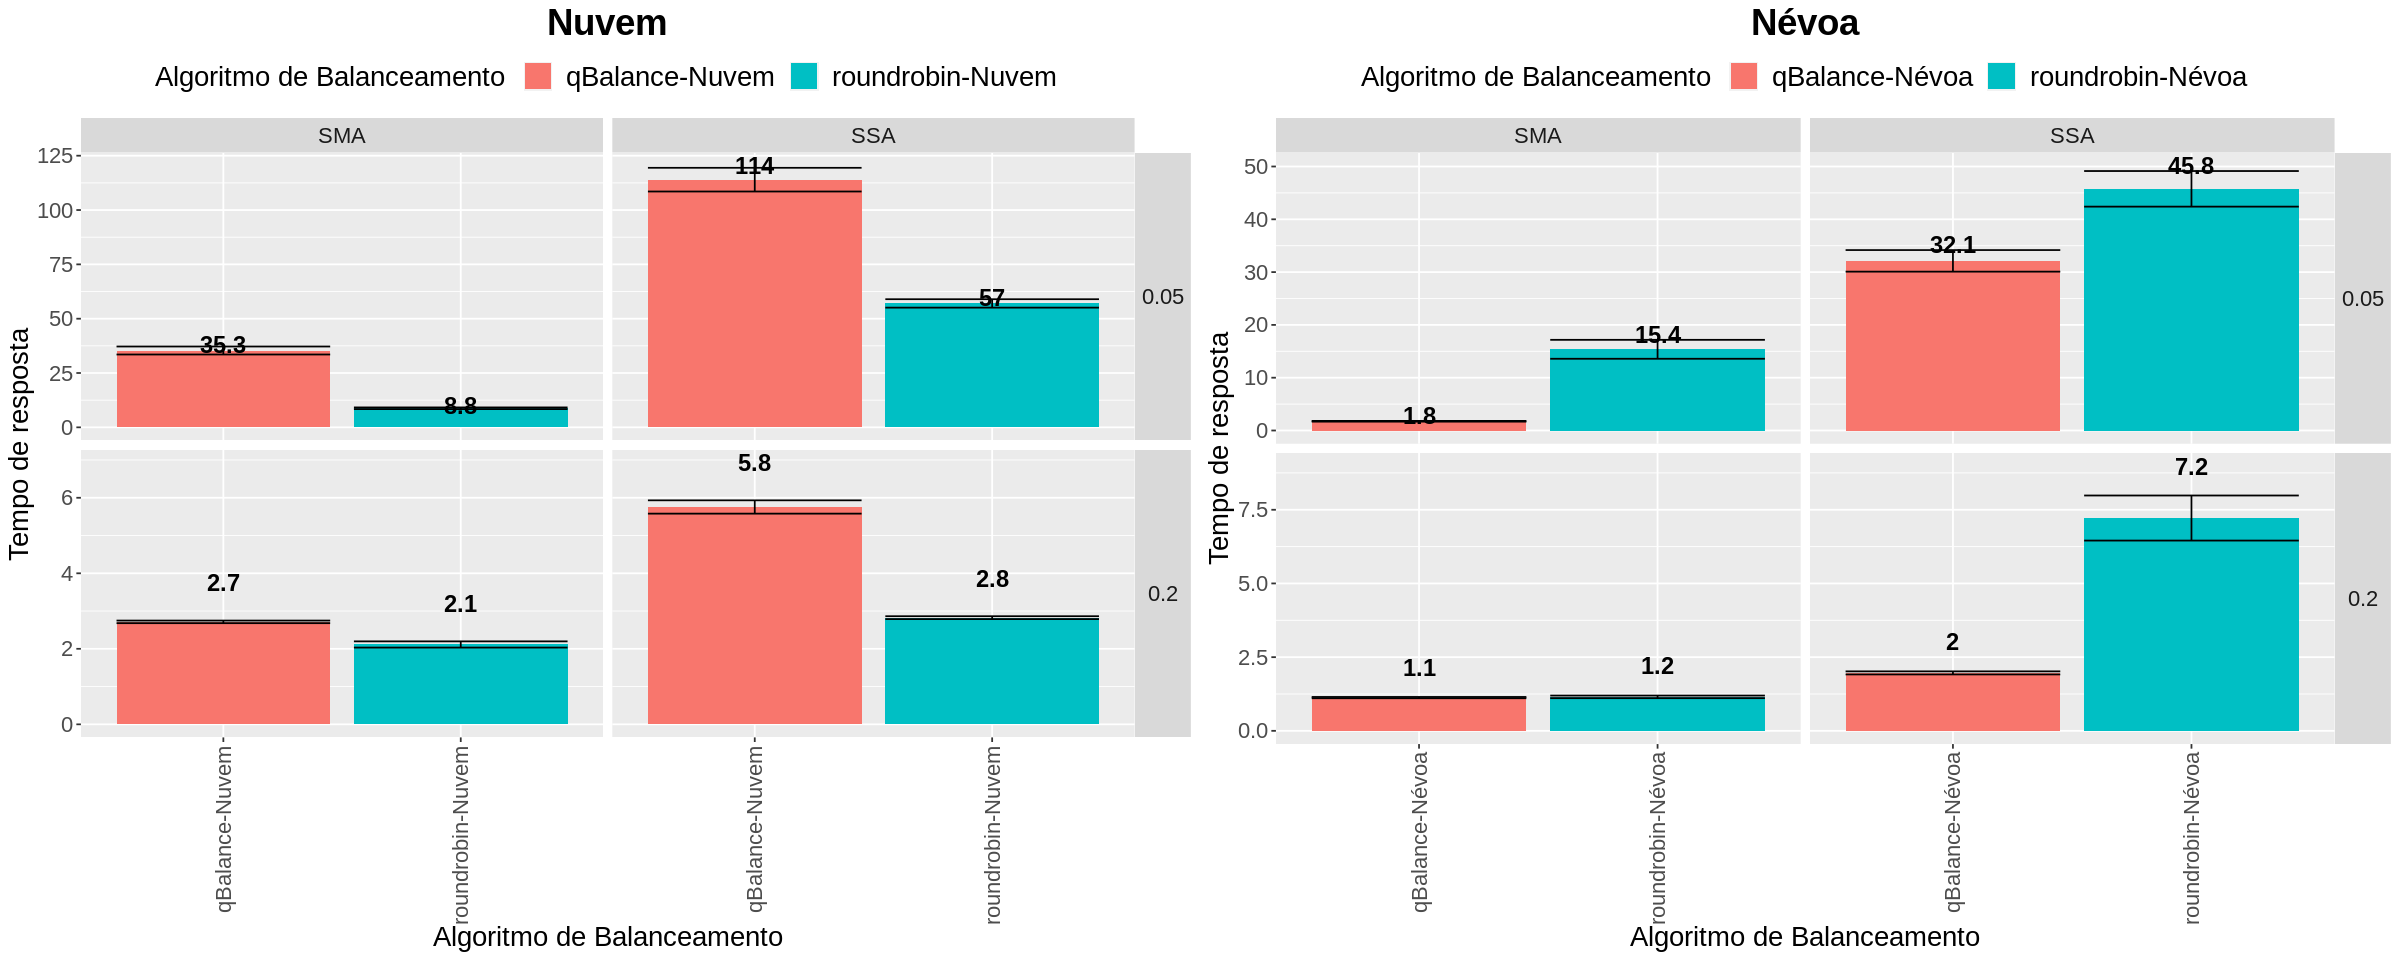

In [20]:
options(repr.plot.width=20, repr.plot.height=8)
p=ggplot(meanTime[which(meanTime$`Localização dos Recursos`=="Nuvem"),], aes(`Algoritmo de Balanceamento`, `Tempo de resposta`, fill=`Algoritmo de Balanceamento`))+
  geom_bar(stat="identity")+
  geom_errorbar(aes(ymin=`Tempo de resposta`-error, ymax=`Tempo de resposta`+error))+
  #ggtitle("Experimentos ")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
  ggtitle("Nuvem") +
  #geom_text(aes(label=round(time, digits = 2)), vjust=1, color="black", size=3.5,  fontface = "bold")+  
  geom_text(aes(label=(round(`Tempo de resposta`, digits = 1)), y=(round((`Tempo de resposta`+error), digits = 2)+ 1)), position = position_dodge(1), size=5,  fontface = "bold")+
 # labs(x = "Politica de escalonamento", y = "Tempo médio de resposta (s)", fill = "Politica de escalonamento:")+
 facet_grid(`Taxa de Envio de Requisição`~`Algoritmo de Imputação`, scales="free") +
  My_Theme+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
#ggsave("tempo de resposta experimentos.pdf", p, width = 20, height = 10)

p2=ggplot(meanTime[which(meanTime$`Localização dos Recursos`=="Névoa"),], aes(`Algoritmo de Balanceamento`, `Tempo de resposta`, fill=`Algoritmo de Balanceamento`))+
  geom_bar(stat="identity")+
  geom_errorbar(aes(ymin=`Tempo de resposta`-error, ymax=`Tempo de resposta`+error))+
  ggtitle("Névoa") +
  #ggtitle("Experimentos ")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
  #ggtitle("Tempo médio de resposta com variação do intervalo de envio das requisições") +
  #geom_text(aes(label=round(time, digits = 2)), vjust=1, color="black", size=3.5,  fontface = "bold")+  
  geom_text(aes(label=(round(`Tempo de resposta`, digits = 1)), y=(round((`Tempo de resposta`+error), digits = 2)+ 1)), position = position_dodge(1), size=5,  fontface = "bold")+
 # labs(x = "Politica de escalonamento", y = "Tempo médio de resposta (s)", fill = "Politica de escalonamento:")+
 facet_grid(`Taxa de Envio de Requisição`~`Algoritmo de Imputação`, scales="free") +
  My_Theme+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
#ggsave("tempo de resposta experimentos.pdf", p, width = 20, height = 10)


#p
#p2
grid.arrange(p,p2, ncol=2)





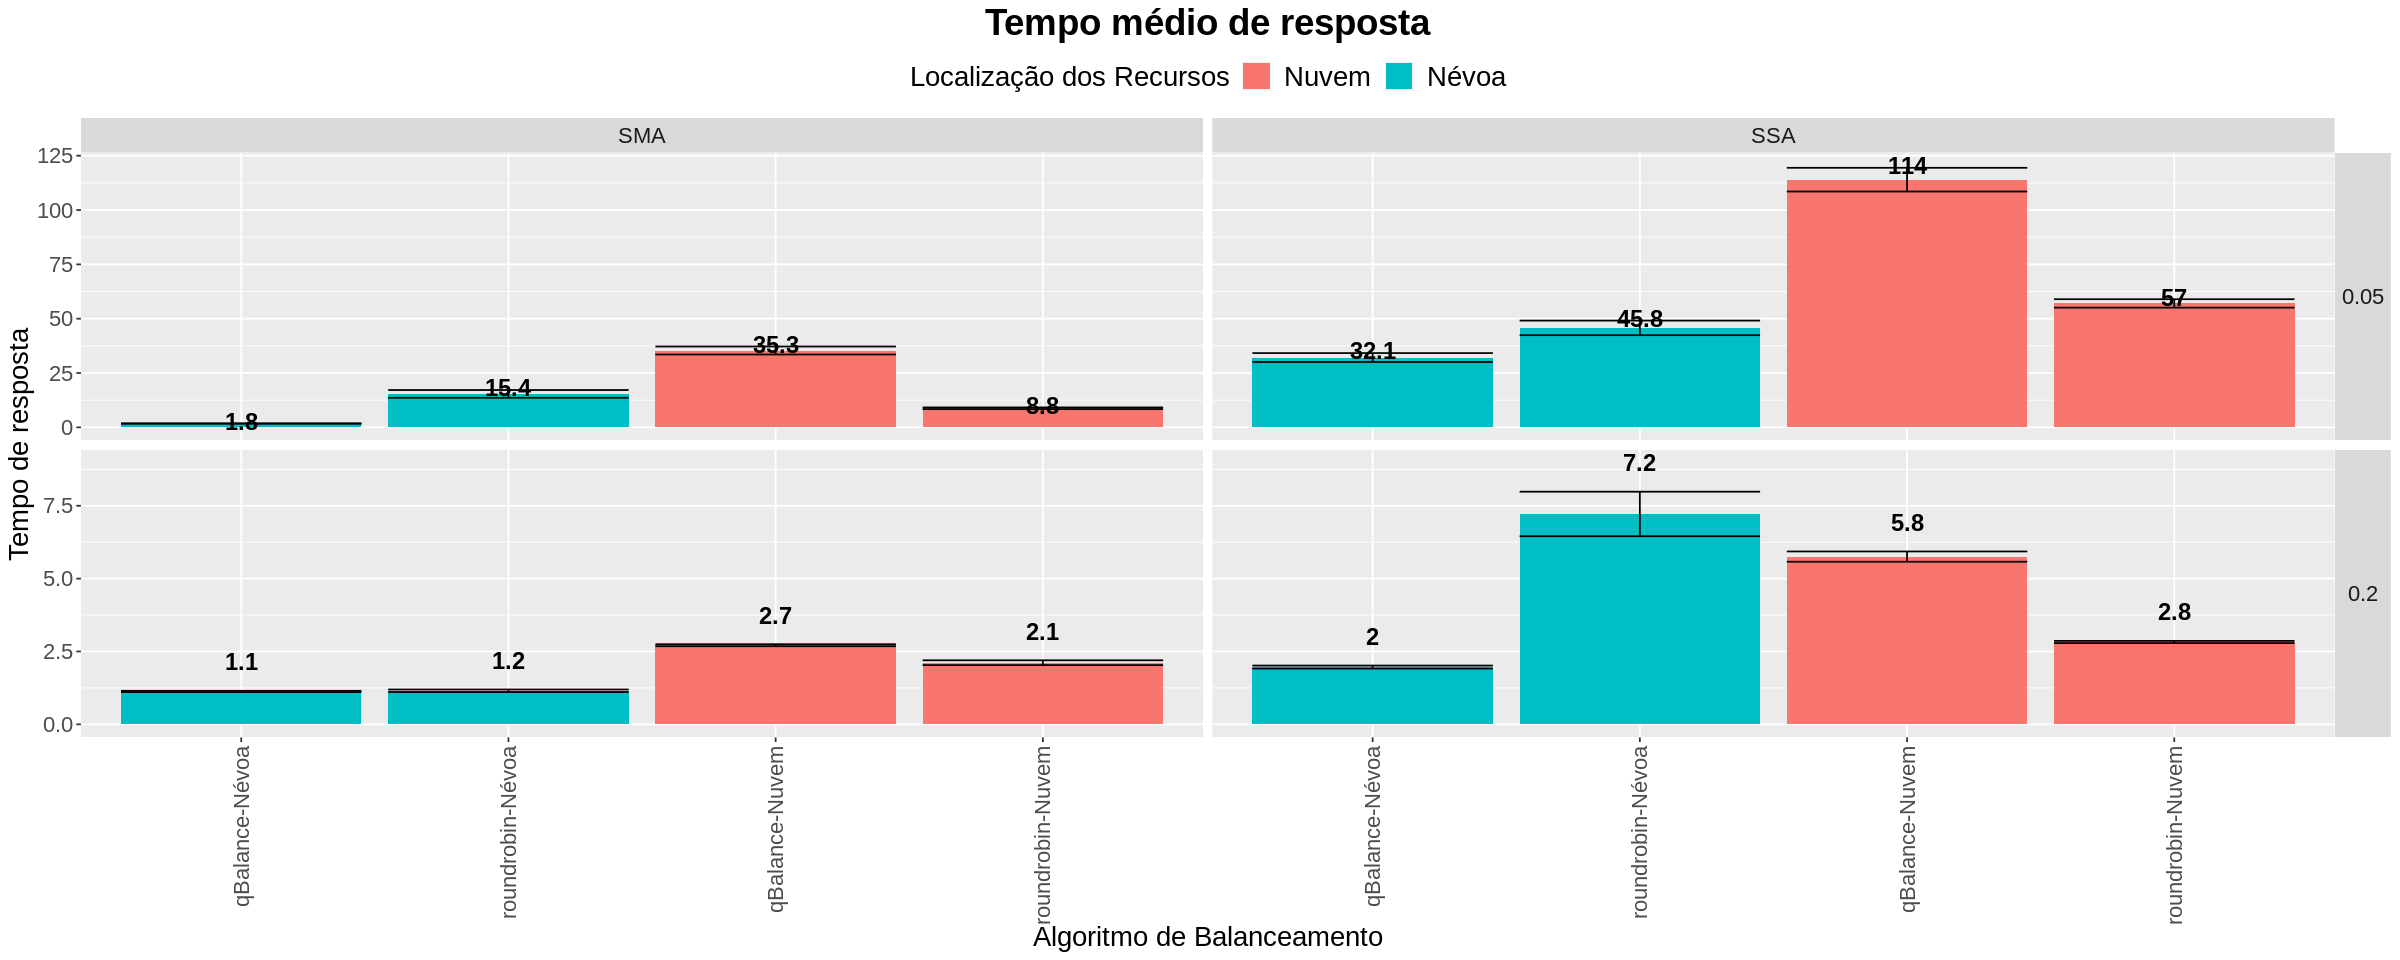

In [22]:
ggplot(meanTime, aes(`Algoritmo de Balanceamento`, `Tempo de resposta`, fill=`Localização dos Recursos`))+
  geom_bar(stat="identity")+
  geom_errorbar(aes(ymin=`Tempo de resposta`-error, ymax=`Tempo de resposta`+error))+
  #ggtitle("Experimentos ")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
  ggtitle("Tempo médio de resposta") +
  #geom_text(aes(label=round(time, digits = 2)), vjust=1, color="black", size=3.5,  fontface = "bold")+  
  geom_text(aes(label=(round(`Tempo de resposta`, digits = 1)), y=(round((`Tempo de resposta`+error), digits = 2)+ 1)), position = position_dodge(1), size=5,  fontface = "bold")+
 # labs(x = "Politica de escalonamento", y = "Tempo médio de resposta (s)", fill = "Politica de escalonamento:")+
 facet_grid(`Taxa de Envio de Requisição`~`Algoritmo de Imputação`, scales="free") +
  My_Theme+theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
#ggsave("tempo de resposta experimentos.pdf", p, width = 20, height = 10)

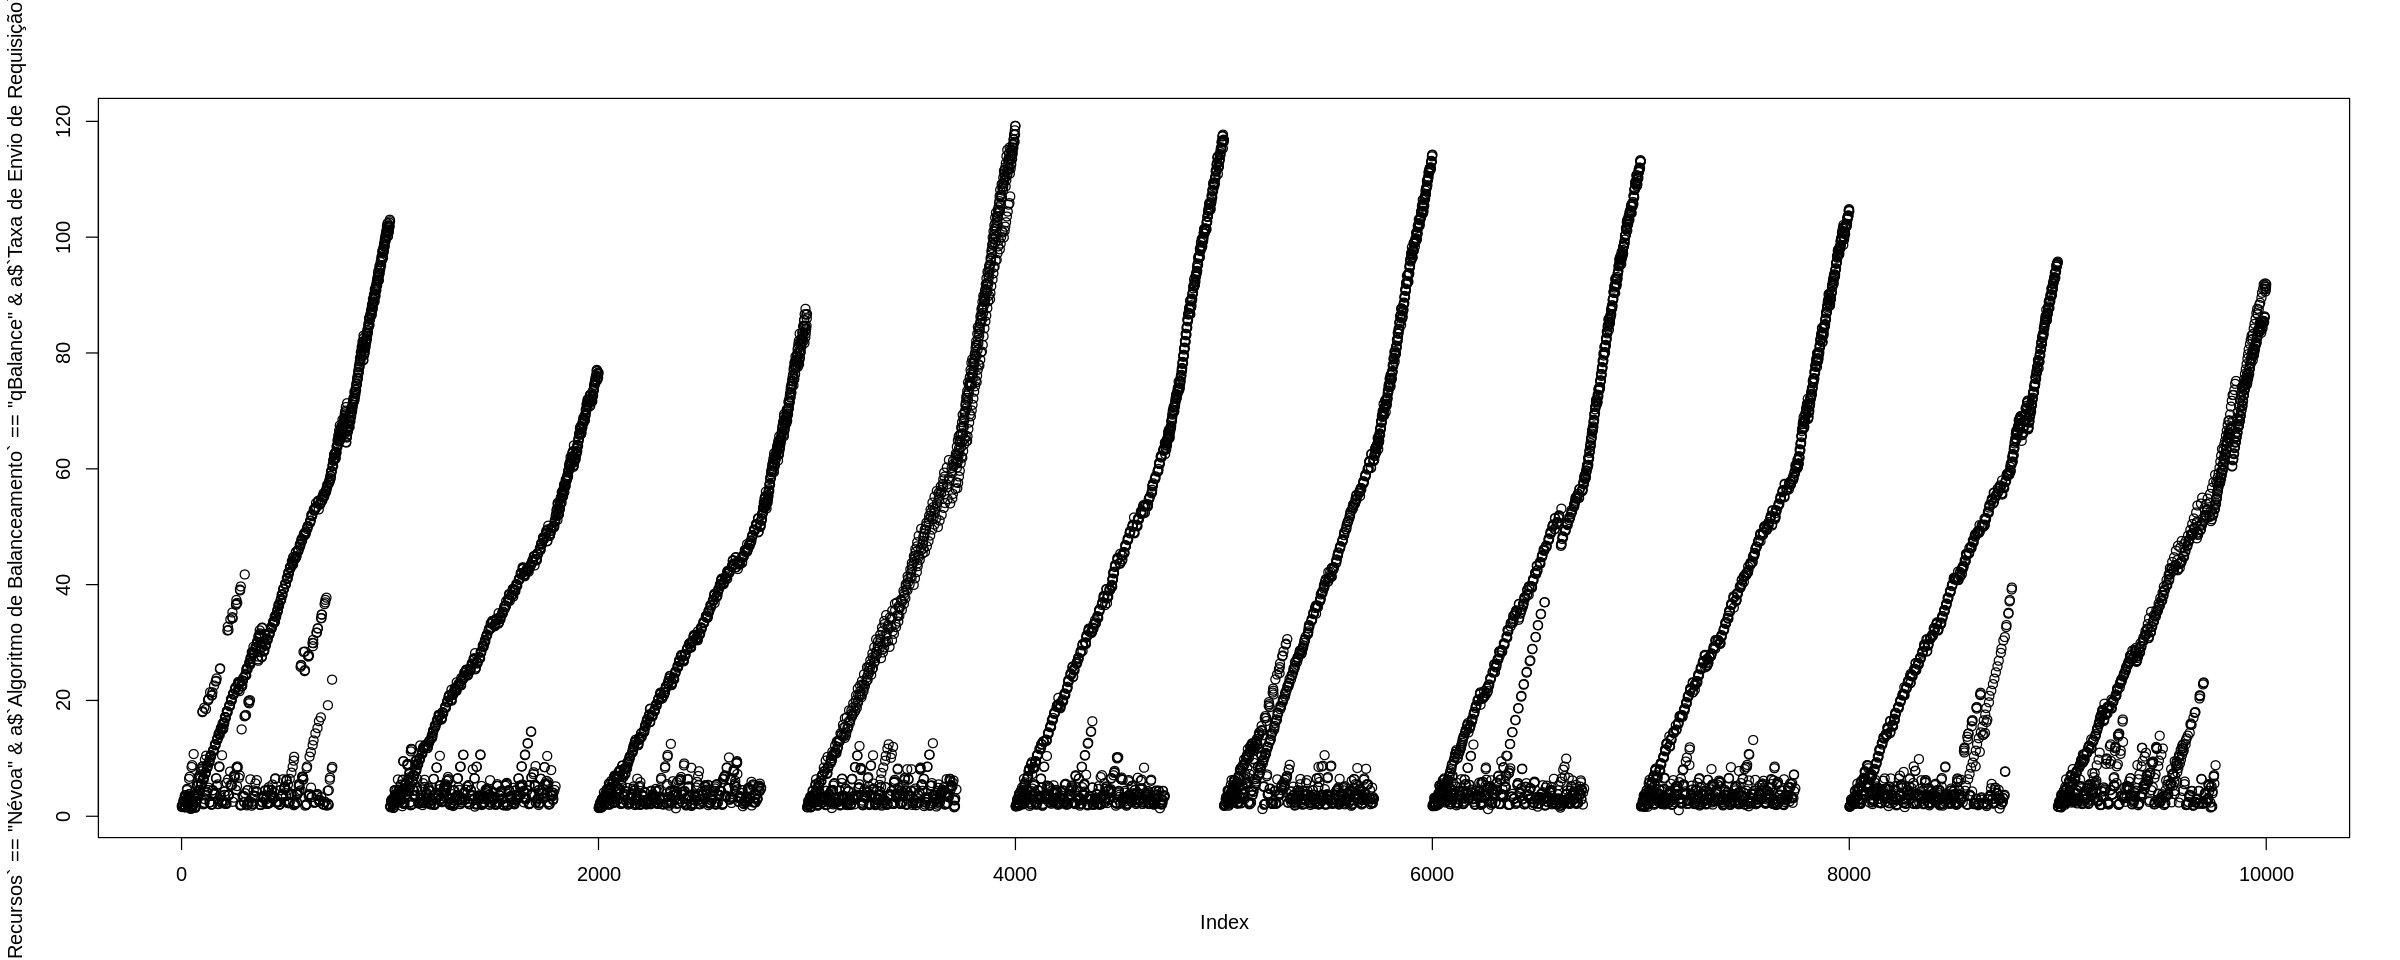

In [ ]:
plot(a$`Tempo de resposta`[which(a$`Localização dos Recursos`=="Névoa" & a$`Algoritmo de Balanceamento`=="qBalance" & a$`Taxa de Envio de Requisição`=="0.05" & a$`Algoritmo de Imputação`=="SSA")])